In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torchvision
from PIL import Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nst-trial/Starry Night.jpg
/kaggle/input/nst-trial/Emma Watson.jpg


In [1]:
image="/9j/4QCORXhpZgAATU0AKgAAAAgABgEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAE7AAIAAAAPAAAAZgITAAMAAAABAAEAAIKYAAIAAAAPAAAAdgAAAAAAAABIAAAAAQAAAEgAAAABU3RldmUgRGlzZW5ob2YAAFN0ZXZlIERpc2VuaG9mAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAEZCAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAEMABAMDBAMDBAQDBAUEBAUGCgcGBgYGDQkKCAoPDRAQDw0PDhETGBQREhcSDg8VHBUXGRkbGxsQFB0fHRofGBobGv/bAEMBBAUFBgUGDAcHDBoRDxEaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGv/AABEIA24CgAMBIgACEQEDEQH/xAAdAAAABwEBAQAAAAAAAAAAAAAAAQIDBAUGBwgJ/8QASBAAAQMCBQIEBQIFAQcCBQIHAQIDEQAEBQYSITFBUQcTImEIFDJxgUKRFSOhscFSFiQzYtHh8HLxFyVDU4ImNGMYJ5KispP/xAAaAQACAwEBAAAAAAAAAAAAAAAAAwECBAUG/8QALhEAAgICAgIDAAIBAgYDAAAAAAECEQMhEjEEQRMiUTJhcQVCFCOBobHRM5Hw/9oADAMBAAIRAxEAPwD1zA6RRqTMBHNNmelOJO0bithzQkpkiRHanvJKUSTSWZI377VIPqMCYqrYyMUyKG5MAbUa0aNhv7VYoSlKYAHFRlpEnT/WoUrZLhSIh3I2iadTO0E0aUAKBV94pxShEp3ipshRI6jG1MrIP7QacWFCSKZO53ECroVIIGB3PajneKTJA7e9KT2jarMqGmT2pX0qBPE0kbR+1H23qCyJKnYTCfsaaBEKJ5NNjfbc0Y25mq0kWbsSBzFCDHX33o43HftSd5nvVijFpIOxA35oNuRIgGaQRIkc0SVQmYiooLDWoauNhzSTuOKOdiY3HNEB77xNSVYY7mi/ejAjiPzQ59v70AFG8/tRxCYiinaO9Ed+RVgDHMdqE9QdzxQO9EEcGf3oAMcbdaKOk7mhuRJMUU8xzFABq53O9FO3522odiOTR79poKgG3JmDQnnmjAlO0Gkk9SIHvQWFT3pP569aOd+kURgyTzUIAaTPpMz/AGo40/UfxRcbpHB69aV036c0AI2M9qAMAxtRz6hPShz71ICSB3pW5EkDiimRIEzRyT06UAERHHTfahwfbtRJ3PYUAdo22oAOOem/FD7be1DaNuOZoo3nigA9W2wkCjkb7bCi59qETPbmgAtuOB1o54EH70O0bx1oR0/egAthMbg0NidxRkdulAcA0AErcT1nvRyQkdyd/eiM7nrRj3ighhSZI7Us7mQd6RvMczREEGeKCBR3+wofVuNvai678cGj+3AoANJk8x3olE8GNqIggmdzQA3/AK0ACdthBn96MGNjvPSiUABO/vRgwragEBUSYHPWhvsDzNKUreJnehtEJ5oLBGdqIEnkbUY553AoAxz15oAMDmfxST+kmj3ImJE0X/q3k9KADBmY2FCRuBwOlHEKEUNge8UABJnkURIA2o5AkcdaOOJ3oAIcbURkR13ocQOBNHJO8UABXXYbb0Bz1jvRTMSIEUBJMRtQAD2HPWiiCZ5+1H7kUcQBPE0EBQev7mhEnv8AbtSiZ+wpOnffYmggld52NFCp96URIBgzT7DY5Vv0pd0PSsNppUxO/Sn0N+XzQBCDOxpW7h2gAd6U3Y9JIAlZAHFKU1CTp5p5tPBFKdA0maXextaK5ziOtRlLiZG8VJdIEyN6iOb9JnvT4mWbCUqUntTUHgHcUPpJFDpJ3pgq7BMmDQSSTM7zRH257UfbpUkBk7Qd6OCdutImKfaEeoioLLYYbKUkq3PSiKIT6t59qcKyekAUkLTO9U2XpDS+/QU3PSnXV7/8tNSJJg/bvV0LfYcRuTIpPWTR9OZ7UUkjbc1JDDnT7zzQCeJoJ2iQAaKZ3n+lQAqCk0X1HqAR0obz1mgYO5oALgj2FEZgkGjSJoGU+9SAAdjydu9CBHqEii49qB52E1JASifvQ5gpO1A/+1AjffigAfngx96V0pMzM7UcHaKgA+wHfiknj2o+fuNqI+qRGw9uaADMQIJ/agPUD2oAbe1AGDt+1ABdJ5JoEmI6UZ2T/Sk7GOKACkgxz70BIHtSlCaM/f8ANSAjpNAE9BtS+RPWhx1mKAE+289ZopBkCgYG5nej27UAAbiNvuKKNzG5o6LrxQQwc/ehvQHTaj696CAhxHSjHB60n7UqN+1ABcTPEUe0e1FG8E9aGmDsT9qCbFUQ69JooIO539qOD2oCwuo33o432NF/ej333mggMARzyKKREAfvRfejMnbigAbSIoK6ckUAO4560Q+nYbdzQAc8/ejkEyBEc0lPaaOBwIJ70AHxAjkb0OvSOsdqIfsT0FGJSI22oJCAAmaOQUmOveiSD14oDbpEUEhgz3kftQJgER+Zo9O2wnvRQAeJ96AAkmgBt2NCYJ7R0oSSRHHagAcggETRlUxydulEAEj780WrmCY4FBAOu+/tQJnn6esUSd5lMGl6YEkT0oATBO/IoxttHPNHPHaiVxG9ABajtPAo5BAHMc0Q53MGlAc9KCBOobDpFHPtQPEyNu9Gdx7d6CSQVD3jpTiXymBvApid/btRiCetLoZZI80EgzTzdyIjeogTKeevaiBKSKhxTLqTRdNugxpNB0yDJ2PWqxtxUwmd+Kkl06QFCKS40x6naIz2xJO8UwpQInanHCZplXaBT0ZmxMz7/wCKBIjcUCdPAnahHbjtVioOvY80oDtEUkHajSsBNABqRp360tvdQmkFZMSYFEDyd/tUE2SXFoCY69KjGFGelAq5kce9F+nbihKgbsHtHA4NEowfb2oHmSd6LneYqxAJnjj3owOdJ2iiEGOKMnoaCLACAO596EjYntvNEvcR1ouDzvFFAGOsEij3IMbikgSYBpW3+IqCRMkCDuaMzuelEf23oyYB2oASrbruKKd5A3oEyPfrQSB3k/3qxFAMz1oRHuDzQ42G3+aOZ+3tUBQmTqIjcb0f9OtI1AKUeTxR6pkbATuagKHJ/ekrIg9ztFJBVHp4PekOOfzEpG+9BA6k8kfTRKUEiByKaU6EgSoJSO/Wkh9H1Agg9akix/UI2jaht7Go67htoD5hYYB6qpt6/trZGpx8NgCQtZ0JP5NFonbJg9+Jo9jzVG9mSzb9JxLC2yf/ALl4hJn7TTZzHZOOBCcTw55R4DVynY9ie9Fr9Jp10X3XfYxRzIqtZu/m0FVu425p50OBW/4pfmrUoAyCOdj+Kkr0Tp4mhtHvUZL6kkBYB9wacS8kzO0dDQA6CNqAP7+9J1COaM7GDv8A2oIFA9+Ioj3GxobE96PaP70ADkjffrRRPQ0OFT0o/wAwaAAB+aEmeDPehG/9qHJ3O/tQACCeOP8ANFwOd6B3SJnftQE7BUGgAyDyTM7UmI243pRHTpNEQNqADiZmh1FCAYP9qERyaAAOd6BiY5ooJoUAGYmj245pPJnsKI6twoz7UALHBHWeKLgj7cUU8HoRQOxO9ACgQQImO1DselEUwZBO29EUxsTzuKAFDkk7Se/NBRjneignePxNFG+4oAORzH2o9QPFJG4EkbdKA22oAVq7jntSFDbYUpXWP3oilO3B60AKHpiSPtNAqgiP2oGO00kwTz/70AGDtuRNAde/Q0ZBPG3uKEE9gaABEdNu9AHffrQmZEcd6SFCSFGP8UAKkyBAoAjgc0Sk70aRInigmx4+5360Y33Mj2ogNt9xR79e1UZcW1BkHanEiRECaZAHelJ5neoLJjxQeRx7U5r1pg0hLm29Eok+wPaqDLGlj1QDTJkTHPWnFEnVBNIIMGTJApiFPYAZFEduZAoAQKEzzzUkBc7k7ij+9FG+1GIgb7xQAU+0/wCKPeR2ogmB9/60QiZB/FBAZE7xNDgg70fA7+9FuD/q60Eg5PEHpRDcE80cg9iQOKLsI0+1AA4gRNED2/NKG3tQ4Bn9hQRQQ7nrxQ6ccUW3b8UDJPt27UAA7D370agDvNEBO/SgTJqSQ9XMwY42pI9/60Dye3ahEdODQACQOf60JHeKLeTMT/ejG2xAoAImSJ/FI1GdjHeKM7pMb0y4vSk7RUgKCylJ0iZNBJGkDSR/XemBcJClSRCR+N+n3qA7iqELKVLKPWQqBq8uB+o8CiiE76LV65SwiYJnYRyTVc5iCGHSVEecUHS1+s+8VzzOXixl/LrbjQxBvE7hSNTKLd8OFUcxGwriWZvGzG8SVeM4UWsJaeUk620zeIQBIHmHYb8xWTJ5OLGuzXg8bJm21SPTWM5rwrAmBcYy95YUnUGzuuO+mua4v43P2dzcrwa3s02rjeqyadJ1mDBJHfrFebnsZL105cOuuvPXIl1anlL1k9YPA9hRKxLUrjUQkAHt2FcyfnTb+vR08fgQS+2zpuO+MGN3iShWLPYctJIUcNYSQokzutUn+1c3xzOF/ibr6VvXWIpKyfNxF1TpUruEyEpj2qK4sOGCkDrAHNRv5ekgGBPas3zzfs2LBjiqiivLC71QXfFDhBgahJq8wm9vcI0/Ji2Uwkz5LzepClRyRyYqG440n1DT7+1LaUhSD6yFjcgHaqxyyi7T2WeOLVNGktMfeZd+ZdW8w+I0DD3lW6ZmTO9bO08WsTatkOWWNYom41aUNXhS6x7zEKNckDCnQUhSpBJO1BZdabBafCYg7VdZ8kemKlghL0d5wrxuxdPlM4rhgv8AWdan8PeGodjoX/UVvsC8WGcVeS3bNXL6wCQh9HlLWBzAPMV5H/iVzbqOoJWAQolA3P5qztM1a3W1qceQtB/lgOkFP27Vrx+dlSp7MeTwYS2j3DhWbcOv1+WpxVs9MFFwgpM/2q/Q6FICkkKSeoOxryLl3xPxOzSEurt8Rt1wpTVw0CR02V3iusYB4jYeXUGzfNiFR5jDivMaBJ39010cXlQyJJvZzcvizx79HZk+oUY3P2qmw3M1pf6ELcDLq1aUhR9Ln/pPWrmTtWoxhyODvRcmBQkTtwaMD96ABMjbehO39IoQJ60ABvNABcHYbUfBJ6UDEigIgigAiPxQ/wAUZ2HM9hRce3egAAxMTNHvB/rQ5NDmdiaACHB/8ihHWSSKEwAORR8DmBQAmP680f8AWRQIBAo9jsJkdqAEkDbt0pQ+2/UGgAATvRCDzJ6TQAfXYfntQMn/ADQJ6ftQO4MyaAC6HqYoxPMkkUW6R3B6UZ2HOx/rQAkjTJ4Pej46c0ZAjfvQ2iBNABTsZ+noKOeAOaEQY6CiSTuO3WgA+oEe5oo560qd9hv70mIERNAB7iEg80OZ7UBuOPyetDg7j7b0AAT0AogAOeeKMSdiTNGkQOdxQAR2G/XmlcRG9EIjkc96P7nfuKCUOj2P70ZTyesUUf6TtSp7bb8VRlwe9GNzttHSlBBJAAjvTpbgbVWyyixDaSf8UoqknfjpRbTB3+1Ic3G3M0dluhCpJkbikkRGkztSid+N+IpPvwKuLCnj32pIPXrS9uT0H70gKBJkxNAB+wojuZAO3ajJ470I53Ee1AA3AHeiAJgDr3pQIPBigABuniaCAoMnkGiO29LggR0pKo36UBQkilbjeelF09P70cwAFUEgO3/LRAAdf3pQ3G8URid6AEDeYG3vRkHiY70DBoHYwN6ADneIgURMddiKHv1/tRSepmgAREQf3o0iBIkGKSVEgyNv80pJEAA7UAJXv96KYIJ47xQUU7kHYe9RnroCEtwf+YmgBxawkbzzNV+JPAIAZS55hHoKRsD3J7VHfvXGnUt26VP3DmzbWnk+56CuKeLfiLc2i3cJwq6Ui9tSlF5cW6/5aFKmWpHUbGl5cqwrlIbhxvNPijWZ58VcKyq23auLN3dF31IaHqiPqPYdq8+5o8WcYxhZDLn8PtTIDKVTseQSNj96xeIXztxcvKdcceKiD5rhJUqqpVoq8cKiYSOiRya4eTyZZLXo7mHxceHa7FvYyr1BhttgrSd0iVbngmq4POkwRqE1eW+DFTctNEk7FS+Z7U6nAFqADgBnf6oIrE5r2buLKFsu6SnVCt9o6VMYBWEoKoVG++1Wpy80FJ8xhayOgUYIqT/CrFuEqZI25BNU5xJUWVHyz4nQVLSd9lcU2tm5jZXlwNpEir1uytG0pKC4pQ25qShltZMKMK3O1HJFuBlC3cqTIKHUgd4pguXCEyppSETuR1rXvYcyUqCdIjgjr+KhO4YHGyWzMcJnrUpoHFmdViJQEAOFXcpMGm13mqApJKvtvVheW7YBStrUY06Yjf71VLbS2sjeSd0kz/WmaFu0MrxF1skdhun2ppy9aUJWdBPbfamrtkrIkTInUOarrjzGwpKE6xxqnimxSFsv7bGnLVSC09sdwPtWow7NRXvcQlXIUkwa5h57msBDg1TwakJu3NJCPTp3Iq9C3TO7YV4i3+FD/dLvzWkwfKdGoEe3Y+9dXyr8QLbC3Gb9sFsIAaYUr1KV10qO34NePLfMBGzu2kxVh/FFvp1JVqRzpjimxz5MTtCcmCGVUfSjA8y4dmJgOYY8FK0grbUIWg9iKtx+d+Zr5z5S8VMZy1eWire6W6LZSi2haoO9ex/CvxdwzPlghsvhGINABxpZ0qnvHauvi8iGXXTOPn8WeLa2jqEiRvQ1dyOe1GRJ2FHt1EntWkxhE7bmhMT1oHuIJohG/JNAAnqOaE7d6G0pg7zRSAd5+9ABg7E9KB7gRQG5ozG1AA5JPtvQImiBgmRQ6SKAB39qHUxzRbiTwaGqeKADBMmeaHHG80Zk/iiJA4oAA+/4oHmQIoA7bc0NutAB8medt6EAjt70QIBoDjb9qABG+3IFDqYmaG8EnYii1b7RQAoE7zzRdY33oGSRHTrSgoAbDbpQAn/8uaAMqOmKG+8dKEb9qAArfY70ZIO5IFCTPQUAOsdeaACBCd+vtR7bb7ihv7HtR9NqAACJJIowKIgQaKd+v+KAJEQn706hAURq270yCelLCxqmY22qjGomJbHKdqDnpHpTIqL5yyN1be1AuHv9qXxY3kqHEp29I360hyQPvRpdO/am1kkkn6RVvZVvQkyN/wCtJmNu52oxPXiaEbQDsauLEjk0Bv6jRlMkEfmKA2MAfc96CAp396MA96MAcnrUhA0oHaoboslYxEDVHNGADtUlbcIqICZneDUJ2S1Q+EpCd9zTCtj1pcwdqbV7VKRDEkkRHelEgQOKSkEx/WgeYqSA9444ouhMyKBke5HE9KSSY3FSAoDfrRRuY3o0CY6CjA9oFQAUT96IxzwfalpA3nikkwZjmgBsyAd5H3pWwTPtSHFBA+9NOPkNqUIQiN1K2igqNXbmkaVGCarr28YsE6lKWpwpkBCdX7Cmgtbq3blxwqQvglOwArlPif4pW2VteH4HpuccdRpJBnyAd9RHeOBScuVYlbNODHLNNRigvE7xGXluzesLBKrXE75uNaF61Mtq/VPRR/pXnu9ubhTIaU8pLKHFFDczJPKiepPc0y4u7vnXrp55TinFlbqlk6iT13qrvcROtR5EAQO9efzZJZpbZ6HHihiVJBvqatkqUoFRBGqVcVBXjQSvSlrpIVMb/eqi9fBKg8pXE71WuruFo/kO6kgfSegpSgvY3k0aYY5q9LiCJHAUadt8WU2P5bpBJ2SsbfvXNH3L5KlKQ8sAGJB3B+1MM49iVm6T8x54GxQ4NjV/gsj5aOwW2OPsOBRBcCDPpVM1dW2P294oeeC2dJAniK5BhWcGWn9N0F2ql8lsSif+lb+1ct8QYQ8wErSUTqbMge80mWHixsclmqTdYe8NCbhDZ5UojYUTzS7VtJbQhxCtwoHaPvWSdZ06iDqA5Hfaqx69vrQ6rF3zmuShSvVVFif6W+Q1yL5gvhu4PlE7b/8AWpKmxp1NKC2z9J61gm8ztXOtu5b8pwp4PT2pl3FTavBTDqgCOh2+1W+NlfkNPfYgtpSm3WgpO8E8H7VTOuWzm8FJ43qA9j7jyS0vcD9J4P2NUV3fIXHlKUk8H705Ra7Ft2W94IOpsk+qBB4qree9cOCCP1dzVSvFHmynSv25paL5LyCl39XBpiVC7F3LcSsnTP6hTLbynBBUQtKYEUlx1bIW2SFtKPBqK4DGtrYDcgHg0yJRkzzgTodMOA8xzRs3jlsSlJ1A8iopX56AkwhyPSaAKkghZJWkSatSK3RaLebuGQT6p6zBFWOXs14ll7E2bm0uSy+0oFKwe3EjqKzCX1N7gQCZV2o3VF0JIMkcH2qFGgbtbPoT4O+PuD5zYs8Jxi5btsZWk6Aox5kc7120FLiUrSolKtxHWvkZY4k/h7yXG3ihaVehwbEfmva3gB8QiMaRb4Bm19KLwAIauFqjVHQ9hxXUw+Rf1mcnyPF4rlA9PGN99vaiTB+kxQCtQlJ2PChQI/c1uOaGABOwG1FO23FGT7b0JEGBzQAUTvQH70NW8HYUr9WxFABE8CZ96IHfrMbTQPB23ooG0n/tQSK2IHU96BiSPbmgTtAikgEUEh/iijgjij33iiHvzQQCYB07DrQ4H9qBiO1ADc0EBHn3pQ5H9KIiJ5oCgkUAI5k0CRJA7c0CrbnakwQDGx96CRXWCDRiEjeNhSTJKp2/zSuxiNooIoQQQDP0mjHf2oj6hA5pQknsDQQAnaaMHv1ogD02oAiIG9ABCfvQB70ZO/ERtQ0mO4oAEyNqIEx9qMERIoxvxQA8Ymf6ihtMminueaMmeYPvVRgcxxv/AIoagelDkDqKLcR26VABk/mj3HGwFKaTqI60+lgkEkx+Kq3QxJsif5ogRv3p1QAVtzSDAO4FSUYngnrt0o4npvFERO52qUy1q3J5obpEpWRldNXPtTjLqQsAqpx1jTxJ96j6dx/ijTQU0yS86SClI2PMVH5PvS0NqWoAbg+9P/LGDqBqtqJanIicj+9FEAbAdzNTPlep4ph6AoJTBE71ZOyGqGSSAAOTxSdUjbcxQiD70AQCQQferiwHgf8AWikHnrR870R0kT0oogMEDg/aKPWOTtTZ23SD+9HvM80UTYeogn07CkLVqHY0oiZJJNNqHSOetFENjaQVqlR2HFNXYDhhaQUjnVT40t/WQlI6muZeJni2MmJRb4ZZF910uf727AQCgDZKeTuRS8mSOKPJjsOKeaXGJD8Y/Ej/AGLt7bCMKAXjl2kueWOGkHgq7HqK8xPeYypy8vH1PXTqyt91apUpR5k1Kfxt7F8SuMSxR51/EbxRW884oHf/AED2FUt/crQhYIS4iCCY715rPllmlbPR+PiWGCiM3d8pxP8AJOxkEDiqZ5lThUWVyYkjuKrbzF1NL1ODSEmNhyKdRdQE3Vuv0giewPWl+h+hDpCwQU+obKSaqXUKbV5tuFagfUk9aug43fklQ8p3eD3moim1KWEuelQ4UOtSm0Q0VhU1dJUoI0PTCk1W3diyvcoOs/tWndw9Dul5kDWeVDg00uwCkD0qhXXsaapUUcdGIUym2J1tKKBMEjrWhwHFDhzjRtXfK/8A4at0q+4qS7h4BLbidRI3B4jvVW/hC2Ww6gSgnYp6RTrUlsVuJ0m3uUYkwlbI8q4VJU2r9J7j2qquXAVQopQtOxPaqfBcSeJDdyvSsCArgirK+IvbUBRCXB1HKhS+NaGqVqysv9DyQVI1FI+oD+9UrjjrQUEuBQBkDmlXOIqtHVB4Ejiag3D3rStqN94nihKirdjybslXHP4ikuPhf1iD1I61DJKgVNq6yKJD5+kkA/3qSLFPtBtwEArSoEj2phTaiCUkxtt2p8StwmSlQ2KTxSm9KZKFBPUg0XQUC3c88Bt3oTFKShTKgQJA2P2p35N1gpebRqSfpmnXAt5GpCpA5T1qnL8LUVzjWhJcR6mu3UUhL2vSlfq6pPepzakq9JAIXuAar37ZTDq9I/l6pBHSmxfplGh9bSVJKlEJjiOtRS6pk6VyAf6VKYXJDbokAbHvUhdsFAJcH1bA9qlOuyONlWZEzxztVhhWIrt3wWlqbUlQIIMHamXrItEIhWnoaiJSpIIUAkTz3q+miKo91fDr49/7SBnK+aHgMRbTptnVmPNA6E/2r05BCoI+navkZhWJuWl2xdMrUm5tHEutaTpKoIMT+K+jvgT4sWXiflZtYdjF7MBu6aPI25966XjZW1wl2cny8CX3idVmi6wRQB6ESZo4G/WtpzQt+m4oQB12NFBMbGKB3HsOlABx2FERuf8AFKBJpPUid4oACSRBA3pW5ntRAHbcfmjExQWC94occUBtzQg6t/2oIYW59jQ4ERNKO47UUR0knagAjJnegKPbYJE0I2M0EBAkb7TR7kknj70B+KMSRQWADIlXFDYDbegBv0k/0of+fagAgZI/zQI5gUOhk9aEke5oKgAPI3ijMACNqLkkzAjejAMGgAcxQVG4A1UASTFJjad6ADnYDf3pQAme9ER260Y3oAd+1DQdh7UCJG1HMHvtVRg6hIBg7fiicR6xA2pbSvTCvxS0Dpyap0xlWgW6dKgDv3qa4oJRGwqIFFCtUUlx8qqjVsumoobWOw43pJST2+xpQmRHNS0thCSSNj1qzdFUuRXEEc9an2kKJBFRXB6j7VKtDAJJqJbQQ1IeWgElMVEca0+1WaGwfVzNEtgGe3vSlKjQ4WVzEoV0qwBSpINMO2xB1J/pTYWpEgGRUv7FUuIt9YbB35G1VqjKpMSedqcdXqUdZmKYKp54p0VSM83bCIkyOKIxI70N0z/Sgd4jg0xChJHq25olCRAG9L37bc0AIgCpAaEiQfxNODbqI96JQB+3vSdJHEkDpQAYO5kD96QvtMijVG3O24ptxSIg/UZ2oCgDy0grcUG22/U4tXASOa8WeJ2Z0Z2zbfXllLdgy8pm1B4UgHkfciu8ePWfP9l8ss4Rh75RiOMyhWgSpFv1Ingk7fvXmnD29TjSJSSlO+/WuD/qGdN8F6O//p+DjHm+2VD1qtDqHDJC9if/ADinHWlpUhQhahtCuFjtV/eW6A0TP1CFIG8+9VQZhMPAhKSI3rjKdnXox2YMAbcacu8PSpLIPrbUZ8s9vcVmrdL7KQtKwpo7KH/auh4utTBW6AVJGym+4qi+VSqXbMCBykiIFaoSfEVKKshIQCW37eVT9aalgpUndI09R2ptbKpGgAK6j360thYdkQdXHHFSVIrzTlmS4yv0KE6Tvp96sLV5m5tglY0uo+od6jPJBQCCJGxP+DTNu+lv1RohUGaYlZW6JS2kp1FQmDsR0FVzrC7VwrWddu4NwehPWrBd+lpCkOiAr6Pcfekl63cQQfShwcc6VVdaKPZU3AaS4hTeyhx7imX71TBJQNSSYINPXLMjRJJSdSYqBdIBTtwoRpPtV60U6IGJlDzepRCtXWs6m8Uw4pK90KPNXCzpGlMlKeaqr1lSFDzBKDuO9TCm6YSv0P6tSQtmduQKWNLjaik+rrVc1cLtCRy0rirNKW1th1hUEf8AkVElxBOxDbilBIUoz1NOLbUtEp208E02s6oWhOlQMKT/AJqQ2S8nRKdSdxNUZZE7DsT/AJfk3IgDYTU7y0pUdPoPSODVD5ULlH1DeD3q5sLxBQGrpJhPBHM0mUUtoYm3pkO8tXEKK9JjsKbQ8CdLgnVtxWiDBWhIKytojbvVRf4aWVSndo8bb1MZXpkNfhADKrVelfqYO6FJHFXzNiHrQajt0MT/AFqnQfQplZ9M8z1qwwfEUMByxv3FIBEoV0FTK2rCNBeUtv0Oeps7DrFQLm1hBWBvwql3F+q1ui24Qpon0nvU5opuW9TBOsblNWVrZDV6MytoyHGRKkbkcVv/AAr8TsR8O8ft7+1Wv5Euj5loHmSJV77VlL9AaT5jaRKjukVXsrGoqEAEwpKthWhSa2hEop3Fn1lyrmawzdgNhjODvF21u2g4JEKE9CKuhx0ArxJ8MHi2/l7GRlvGnEuYTeIm3ecVu2vgJAr20FBQGkbHcGa7WLIsseSODmxPDOg53HYf1oTvttREc/ah12/ApokOQIj8UUbSZmhO1D8SKCoONjRjgxRCQNxvRGdutAChtRSCSY42o9+m1FEdCaACmI6UZEjn80JJMEUIIPtQABHfegExE80Q52H9KBO/fvQSHsBvvRp422JpM7bcUYPQUAgxA4EigozP2oh2o4AoICmAOCBRCCdqGo7QN6NP/LQAJBG/70YAgxvFBUFIjYChERxQAUwduvWjk7RyKREk9wNqPcSZBFACgYIJHvQkdqSD2MilK2O9AE9xpKUdARUeI4NOiQSVRBprqRIV7UtDnsUF8U+HglI08dajARFAEmCTO/ShpME6JKnAR/zGmTvuRSZHSaABVuN6KBuxaCAr1TE81O85IREiOKr9JmBzTgB61Vqy8W0GshRMUu3VBA3/ABSFJJ2/rQQCD2PFGqJSp2XiTIoEe1NW52CSYNSORWR6ZtTtDZHSolwkIR0npNSVEJ5O01Du3Rp0gwf7VePZSb0Vij6jvz7U2o9UiKWomTSd42ithgexJG8f3odfegZUCDFEnvxUorQU7jk0NW+280Z57+9FIgjqakAwJjv2pKpConmhwedqQV7wEzt96CRKyRJ6ExtUd9+1sLS7vcQcSzZWTC37l1R2SlIkge54/NOnWpR0gAjgVxD4js3fIZascpWzpTd4yoP3nlndNuhWwP8A61bQegrPnyLFByH+Pi+XIonBM4ZsuvELN9zj90lTbLvptmlH/gsJ2QPv1orJHB+lIHpJ/tUBi2lBQkJTIBUZ6e5qyLzDQ0oVqVoiRvpryOaR63HFJUhLri3HNKBpCd4FEWSGwp0SEq3+1SGFySpKJJAlRq6tcDubi3U4pPlNo51Jmayc+JpULOeYzCZLEraBmDuao7W9SlUD6SZAI5rVZrwZ6yxF9pJUvUjzU6Tyk9KwLi1NrkpOx9RB3rdjkpR0Z5rizQOOsgEL2KgYI5FVrjot3JQoc70bdy0pBCyTKRv2qBffyFzJIVBBI5p0dC2rJrzzam9KBKCJJNU1zdpUSlOwI71AexApXpMgkd42quduSZCPSnrvua0QZmkWZu1rSkLJ1JPpOrikfxNSVELMRsoVTi8Ug+ognsaRcXAc/mJPqB/YfarlS7GKKU4SVbEbT1pSrhS0DSrYmd6y/wAytMEFUHg1KaxBQBBgbckVO0QWlwUKcWFCdplNV61IebLfCxxPai+dGomDAHQ0zqS4uUyFFPXrS6LEddsVo0qTKeTFJSpdoQlJluI36VLYeWyrcagdoI5FWXy1vfIC0AIVwQrqalza76I4/hEa0vAKSBMbkDmjLOiFISSmd5FS28NUwSDLZIkCPSfsalMMFKkpAC+89qU5fgxIYbbV6VQHEHcjtTxtSr1N7pHUirBbbaGgBLCifpI2NIbfaYAWJChsps8EUq2MoiMXjjKtLglJ2k9fY1LTiDK4StUtqMKK+R7UbjVvfMlTLnrAMoNU1xYONhSQJkyCP7VZJMq9FncWDbyApiDtMA71TXLKkyY3QZSTz+ahpvbnD3DBUoJ4B6VMaxxDw/mpTqV9U03jKPWynKLRW4jceY1KSPNHIFR8PxlTKy2tRAV1qwurRL6S4woKVO6R1rO3TCm1hURPNaoKMlTESbTs1gu2n1oO8ffaozjSUrKx9Cj+BWetL1TRAUZA4FaOyuUutbkqSdo7VWUHAqpciyw599tSSwstvtethxJgpUOo96+lXg/nVrPGR8LuPNS7eW9uhm5UFAnWlMEn3r5nWpSkhQJ1gyIr0L8Lee05Vznc2d7chGG4qylry1HZLurkDvTfFzfHPi+mK8nF8mK12j3SBO5oDnrQTvvEbSJoA9P/AA12jhAPFCKEbwN6AP52oKgkgf1oTvvQAE79OtAUAHM9qI7mRRDc7GgaABBmOZpUdOlATp96EyOKACHEUUb7CjmaT15oAOI9/wDFGPfmgnmaFABgySBRSD9Iik7jg0ojfp+aAEhXfY05MR0nmmxv1604d5ET3oAI8UNogf070XIPq47UNh225oAOZ+8Uk7wBRjkRFDid5oALjg7fajAn70BtB4/NCQZBFAEoqgAJ/rSfvFGQQdu9ERSxoY4JOx7UDJHYUUTGk8UoaoBAnvQASOYAgHk1MabhrUQCKhiYIFTiqGgmNiO9UkMgNgR6uKfZYU4Zj7Uq3YLpG0gVbMsBtI7ilSnQ+ELIK7QhqTAqMi2kH2O1Wl39MAU2gAJFLUnQxwVkIS0QDT4uIG54on2wfftFVjpUn0kkmmKKkVb4kl68BWY3A61Edd1niNu9M699xzQ+kmOKcopGaU2xConUBv8AegdwQRHYUk89J96BO422pgoEbz1pJ5OwpUAgx+aLYgbQKkAHcTuCO1J23n96MEHpPegTIAqQEK2EA+1ETpEdaVMKJjftTalyIT/7UAMPuN7IW6lskFWqY0pG6lE9ABNeG865tcz7nfGsfOlGHlz5eyA6W7ZIQB3ndW/+r2r0H8TOd3MrZMtMBwxQGK5lCkrUnZSLRJhQnpqJA+015LXeIw+ybYSoEJ4CeSrvPauF52e5cEdzwMXGPN+y1ucQ8hgpSpA6hPWmbK6RcRE6p9QHJrHXWMKU7pbUNR2Ance9a3KWHrv3EJ3WmQpRPKfaK4mSPtndhTdI3OXcN+bKQ4IBVp0cyP8Azeuw4PlrVbLbfWFEgI8pBj80zkvKLrTYuHwEKOkhJEgbcAdZrqmH4Im2a1kwSeD0H+KzxxuW0bHOONUeb8+5dcw51Nw2hSksK0BI/Sg+/Y/4rjWLYS6X9SUhSXFfyynhXavXXifhYs2GcTUls2ziRb3BAMJ9UoJH7ia8/wCL4E/Y4k9hqiPK0qubZcTra5BB7imY5OL4iskVNJnHnGXbJbiHQpCgohaeoIo3XUXdoEknWE7jv71scWwsXKV3K2ym5T/KuFHaezhH2rFXmHOWjx0g6ZhE9RWrkjG40Z3EBpXChKRG871BWvUTBmfpnmr2/ZDrQWEwQIIjis5ctEkEczsa1YnyRmnGmNOE8q5TtNJKFJSTzO89qS4FCAoyep70gr3VOoRWlCGLRpUVAyD+k0AAEnortRKKCkKG6htttHvSXEkwpPqqQHQqQkgeqN6W0Br9KdhxPao+6CkdAakoXEJI3jpVGSgl6kOJVvo+/wDalsPqtlagqQeT3FFs4NJTAj+lR3VFpMt/SdiKhb0S9FuceWWzpTrSNgDyBUc4zK5BKNPvxUAN6kBbCojkHvSSoqB1oAVHTrQoRIbZeDHSUpGoPJ6hXINSWcXYuUqDoCVxsVCseUkK9BJ33ipDCg4NLpKDwAal4o0Cmy/WfLXNo7oJ20ng05b5gU2oMXzYKT+o7R9qoFsXKElQlaAeh6UG3yJbdGpKuh5BqPjTRHNmjdat7pKgFxP0k96prrBHWwdIUqO3NNIW5aguMqKmiN09RVth2MAJh5WoERB6VCUoddFrjLszqXnbcxqJilm6S/PmgGee9XOIYWH0efbH3KR/eqZ1gPadI0OJ+uKdGSkKcWhpdml1OpgaiaRaPKtH9DgIg7ian2SgHNKpHG3f3q1u8KGJWySEQ4kHSpI3+xoeTjqRChe0MWb6/PSEqML3HWtCla20ouLZxTNw2dSVIMEHuKxFu47Y3PlPykjYTWktsRBC0LAgjffrSskdpoZCWqZ9IPAjxFt/EHIto6VODELMBi4S4oal6QAFfYxXTt9+lfN3wa8Q7zw9zlh9yxdoaw24WE3IcBKNPUR0NfRnD7+2xWyt76weS/avoCkOJ4Ndnx83yx32jh+Vi+OeumSRJ44oRvud6MiOOO9EeknetJjB7AUJAE8xQJk7/wBKI7DgzQAB1nk0KMCRRT0oAMGIih13E0CPwKOOgO1ABdwetF0mKBHq22o1COfvQAkjbbvQ426UoqIJEbUQMGgAARMn00NRI2oxvtxQ2kmfsKCQk8mdqPeQACY5ohvAmKMyZ3J32oIB2gRFEJkgiaVJM0QUQTEH70AEdjvPaj42NAemCd4o0yPegAEACRMUAQOKCgepAoHYCetAEkkzt6h0oglRAHPUgUBMxNPNJAUn7c0sclY7bW5WqRUh220N7bHqamWrQCJ/8NC5KS2Qk7Gs7m3I1qCUSjIKVQkSe1WFqwp/dW4B7VECSVExV5ZgNtjvVskqRTHG5bJDFulAECniBvSQ6kdd6Q4+kAwd6ymsjuet4pHA5pKyECmkuElaqZdd1ncjbpTEijkOLcABnf3queSV7j81IWoAQDvUNx/eABxzToITNkY8HbeaLeD2+9GTB/rSTHJNPMrDUAYnikgQO4pW3B46GgRtzzzFSVEAQfxvWS8R/ELB/C3KNxmLMocdbS8La0tGlQu7fUkkIB/SIElXAFa2UjYSQa4b8VmRMSzr4aWN5gaF3D+XLpdw/aoQVLdZcAClJA50xJ9pqG2lotjipTSZS+HvxdZezfmNjBMyYN/sw3eDRb3xui4gOT6UrEbA8T3r0UttbSi299STBgyD/wBq+RCjKwJIGqdUcGvZ/wALnj+MbaYyDny8SjEWEhGDXzy481H/ANhaj140nrxVoPnr2Ky1ifL1/wCD1Mr/AJTxTLjtvbW9zd4jcJtbG1aW/dPq+lttIkk/ilOJWham1+laDCvasD40Yw3hHhLmx17dK7UNrJ5UVKSkJH3JquRuEHL8GY0pzUf08heKviAvxH8RMVxxIU3hrSE2uHIJ+i3T9Ko/5t1f/lHSuaYzdi3YWlJI1HafftS1uKt0MokeY4ZXB2HX+lZ/FXlXt0Up33jmvK7nPlI9XFqEEkO4LaLxC8BAUsIMqI6+1epPCfJfmhh54EEiSniQa4f4f4ELh9kStBUsKSpI3V/7bf0r25knB2rbDkNpASqfUSN+N/6zSc32dGnG0lZrcGwplm3SUpSkoA0nrtV0UelMz96TaI9IBAgD81KWk7EimrHSFc25FHjWEW+LYfeWF+lKrS5aLazH0k8EfY715jxWzfw8v4LigT/FcAuPKQs8rRyhY9lA16sfG0Rt1rm3irkZWMoYzJhLBfxawY+XuW0Dd613UVDutJ4HWsOWO+SN2N+jz/j2Gt4g0MTtEKICQl5EfUn9TZHccg1gsRwwrW5bghaCJaWR0PEV1yyDbjztsypS31o1rbjcjqR7+1ZvMODtqa86zSpKUuFSktj6Cf1Ryft0pVuhzhZxt5DSF+VcJKCr9UVS4llt8IXdWCQ6xO6QZitpj9gQVkhKlnZRnb8Vl2nX8JXDbivLVKQBuBWrHKS2jFOKvZkHbbzJLQMg7jqKhrZWkk6tQ4jtWzu7qyvVeYq3+VfHLzfX7iqm4tA8pSkKSoxyj/IrfDN+oxyx/hnI9QWlXA3B6VIaJTEzxU+4sQBq0+rg9o71HLJbCgqY5inc0ynGhkQlWoRFKCQleonfipbdsHAA0NXUwKJdmVpUEpjSeD0qnJBTGGiUqKVSOyjTikB5KUK3UZijUhaU+oFUCARSmkJIBkjp+aG/ZNFYkFkkQCgmnyjWIEBUbEdaeurfSjUASDsR0FR2UgegmZ60y7Vi2q0ICdBAWAAadGnUQUyehI5oaFNKKHAFJJ2+9OeTqSSg8Df2obIoQ0paAZMp1bgUi5aQoiFH1HnrRtphUHYUt5KVepG0dJ3FT0wGWtbJHUHY9YHvRushuHWPuRQQstrlY2J3+1TAwl5suNnbnTNS3TIH8MuwuFcQJKe9KvbYOO+exAPbtUBpfyi9aeFHce1XVipKgdZG/X27UmX1fJFltUVvyZjzmhCqsMGvFMulK1/vSww5ZvhKoLbn0mo99a/KqDzG4Udx71VvkqZdLi7RZYrhtviDSyluFAekjoazCG1NrDYV/MRwOprS2l1840AZ1p4A/tVViloqStpOm4bGqByRU424/Vk5IqX2Qlm6cW0lpRhAXv7GvZHw0+NAcu2srZkukNlwBNq4eCoDYDtXjjDrJzGGXV2KdT7SdS2+pjtVllXMVxguJWd7Zum3u7dyUrKZ0n3BrRCbxytejNkxrLGmfWYyYnYikzMf56VivC7PTHiBlK2xFDwduWQG7mBB1DrHStokyOZruppq0edlFxbTFcK2HP8AWj+9CRwdvaiPTqKkqHxFCdthQ6HgH70Q2meKAAPtR9eaH2ND7jagAt53NHHeaEfkmiTCh1HtQADtvAoE7UD770D2oAA3FAAmJjaiG3FA7niAaAFQdXsKBmB370cnoJHSi6b8dqCQRH0zvRGOpijEnmgqNx3oICAVsdv2o46A7UAR0PSgZA9qCULERIANJjfvvRHnnpQO5g8jtQFkwNkkApkCpzVsSnpv/apLlvoI0c1IQmE8BIArJKdrRvjjp7EIJZRA3qK4orWRO3tTjroH0mZ2qI44EHn9qiKJk6HVhKOBvTwvNCIUB7RVa4+T02+9NqcVAk80zhfYr5K6LBWIQduaSq8JG+4NVpUf1GaEngmNpmp+NFPlkyyXcBCNj/WmPmYJPJqJz1/eiUSQd4NSoIhzbHFvk7GkauDxNIMRzQHXnbp0q6RTk2AQokCSZ5oEdzx7UNgIFAweakgSB16TtQ3jtQO0zRE9OvaKkgBTJ6UaXVWywtBJ2II5BHXb3oTvvtSVQRPbmgg8Y/E78O6MEF3nfIFoTgrh8zE8Pb3Nksn60JH/ANI9f9JPavKXmLZcQ60osvtqC21IVBSQZkHvPWvrvKR5iHkpet3klt5twSlaCIKSOxG1eEfiT8Aj4e3xzPlC2U9lK/dKltpTP8Pd/wDtqPRJ/ST9qpJVtDouMlxkdw+HDx8T4nYY3lnNjwRnGwa/kPq2GJMpH9Xh1HBG/eofxf5kOGZHwfAmzpexa98x0RBLbQ+k/wD5EH8V4cwy+vcOxO1vcJuXLO9tnA4y+2opUhQOygR1BrrHin4pYp4r4hgOJY+01bXNhhyLVaGVEoddklTsHhSp3rL5eX/l17Zq8Tx1HLfpGBfeUpSnVQIHpAHNNWVhq8xx7bUZ0/4qS3b+Yoat08n29qt8OZS9dtpVBTsB2FcG6O9FWzqfhVh4S9ZuuEKK1gwobE8AR/5xXrfArZLFslAB1AwZrzp4XYWFXbKkgp0LI2G6TH9o3r0xYgKSCICSBpjr71ne5WaHVUi5ZVpUPbmKecd1CSdqgocKNir8igtZO0E95p7yaKLHsdXGg8n2pKVFsJKTCuU9iff2plbh3mBA4FMqeSAlSlECP61mbRsimcg8WcgXlkU5syY2VOMOeZf2qN1JTuVKSBuRNYm2FrmW3ZvbFxLN19MKIGhzqFDpvXpUvrQrUy6pHQwJ1Dse4rj+dvCh568dx7w18mxxIg/OYW4dLN2OZSOij2rFk06Rrx37OMZnyr5b60qaLBKNTjOnSQ51UieZ61yjEcKctnHWX24KFED3HevRtrmjDcXQcBzvhr7SmQApu6Gi8t1k/oJ+pPXbpWYz94XqTaO4tlp4YvY2yCVhvd9KO6h1A6xVITlHsvmxclaPOV7aliS2VKQR2qNoAIUkhLnKexrdP4EVNoUClbaiFJWk76Y7djVLd5fUPMKUxBnSBAArdDPF6Zy54WtozrxVHq1AnnsfzUZxEqHmApUf2NXpsbgBKVtFSQN0pG9RyyT6S0YB6iCK0LIhDgylOppRU2soPAipTN0FoAfTEdR1FWnyBQoqKQsDcg/4ptWHIUVBIUkngRV+SkV4SQj5ZFy1pR9aTIM8VDNopDpEbzvHFKfs3bYhaDqHOxpyzvm0rLdyICjMpO4qVa6If9kctKSFADU2owR/1qI5aeQQqCEHkRWnVYsOwbV4EnfQrrUS5sVJOlfMdeYojOmQ4lO222pIS59J4Pamiwq1MpmAfq71NcSnX65SSNyOBSkLn+W6AW+/JI71fkylFU6PNIJGhe8e5okJUtR0gBY5FWNxaFJcKCCgCZB/vUAoU0oEcRzTU7QtkRydJS4N52PalWF0GLjSo+lW3PWpl1aBTaViQT16T2+9VLqShR1ApJ4nvTo1JFHaLC/T5TkoH8tZ46UVhckKLZMKBlCjxTTVwX2PKdIB6KPNRFLUh0KEgo5McipUbVMLp2bJLovrYoXAWBtvwaabdNwwpKwTOyk+9VdvdhopW0djE1LddRb3SVo2aeg7mszjWh1oiB5yxuFx6QkyPtRHEXEvpePqPPtHan8XtwhDbrZKikwqRVM+5qHP4pkUpKyjbWi7wvEV4HjKLm1XpQog7dQeRVpmJu2ubwYnhbYaS5u8gDb7isq24p1lKjCVNHge9XVhca7Q6T6mzuOZFVlGpcvfQKVqj0X8KHiBaYBme5sL68W3b4uEthsJKgpaRtPavcO4WQdq+UGD393l/F7bEcNdVbOIcBC0HdBnp+K+lvhdnS2z5k2xxS1ecfdQgNPrcRpJWNp/MV1fDyXFwOR5uOpKaNqBJ3pRAA54pKTvSie429q3nNCMHajAB2Owoh2iZpX/AKuaACiT2oHb2obTRTPvQAZMDaKIGBttQJ4jejgR70AD3PTiiJ26UY354oAcmdulACRvPedqHsBx1pQg0R7k0AAmR2oxzqFEZ6cUNRI3oAHWgTB+9GqP2/rQjr/SgkInYAD70fG44J4od+3NA7waA6D7RvQ679aLb/3otuDQQbV1EqMCodysNpIO5qWXQlJMVUXb/mKhPXg1z4K2dWbpDeoAE8VDWQDsOvFOvKISERt196jyROqtUUYpv0ET1oTJ54pO536UBweu9MFg5nfegdxzvQoTA7mgAjAO357UNQiOKESBtzztRRuf8UAH6SNzEdKLqBQmeeOlHurk0EIIdT07miBgDf8AelTtsN6IcCQKAAQekxSSDyAeKXJAOnpzRHrUgJnaP8USgfcz/WiPU9B0rh3xO+LeM+FmVMHtMoO/KYxj/nzfaQpVsw3AOieFkq2V0iostGDm6R25YMwZA9x1qPcWtrfWN1YYrbpvcLvWlMXVs5ulxCtjt3HIPSvDng/8U2ZMr5kbY8R8Tu8wZavSG3/mFhbtsejqFRMCZKeor3Gxd2t/h9piGGXTd/h162HbW6Z3S8g8EVbXorJODSPAPjv4Dv8AhTj7d5hZcvMq4gsmwuTuW1f/AGHD0WO/UVzZy1LbiULI1JQAqehr6cYxgtlmvDLrAsat0XWH3zZbcSsA6CRAWmeFjkHvXzVu7bRjOIsW4WWLV1bSAsyYCiAT32FcnzdNHX8CTlF2RwNDSNEA8EjrV9gNoUuo2hbiwlIVv+Y9qpE+p5LHJG6jW0yswA6HXgI/T7e1caf8Trx7O7+G9upFxbaSsr3c5gwNpPv0+xrvFhIErJCjsZrj3hiwt9K7kKJhGgJgAIQP7ma6/YqCmwEdtwetZ7NUY2WXpED9xTRVA2596RrUgmTt3oion6d+xqHIbGISnJM+0Cm9etKZjbvRzJAAgcUSQD6QQogcRSmaV0NvuaSOCTtt0ppatJ1AkFPUVIdaQU7fX/amSlSQZgSOaRJOx8KKXMuVsFzkz5eZMOauXEohF0j0vN+4UN/xXNr/AMMMy4A44/k/GEYtaoblu2ulFFwof6J+kj711wCAOIPXvRkTz9NZpbRoo8ZZoyxeN4s6q8tV4Q64sJ8l+UeW51CSdiO0Vl7pnGcOWsvW/nNgTrCZBHc17yv8OssbsnbDGbRq/snRpWh1IJg/6SdwfevOPiZ4UYnk5JxHLvzGJZbUSqB6nbPn0qH6k8UKfFJMz5MTu0cSXioC5etFtk7QlOxHQ0y7iFmfS83pI/URTuJN3AQl21cU424I1BPB96zD/nhKgApe51QJFb4NNaME7iTH8RbUjS2kETAOmKhnEHNMaATyNt6aQW1iXEkHtNOpSkDUzBRMQrc1oUuIh2yNeXDjjWpCATHAHWqlbi3CStvcnc1ev620hLaUgHmRwarH7IuavMVKpnUDtWiE77M80yvLxbWIUpJH/NSVYg84RLqiE8yaFxapbKlGVJj9qrlJbIjWZ7dK1xUZCJNomm5c+pRBTOwmgnEy0AYCgN4qncToMTKqaUowfUR7U5Y0xXJmhGMtLJ1CNQ360yq/aWBJG3G1UKlKg70nWRv0q3xIrzZoE3oZUW3CC0d0+1RblfmEbg7yDVV5pPvTgfJiTEGpWOiOVji1aHJA4pa163AQdlCAKiqdKxuaILJ44TvAq9FbJjS5Q4iZI4q1NwbmwB0pCkdJ4qiSsJdkcVMtHQ0441GzggD3pc43svF0XzV0m/tPLcOrUnv1FZ16UkoUIKTBFLtnVMHbYg0V4oF0KPCuarGPFlm7QdiqXfLGyV7H71Y2Nx5bqimQoGI71UNK0ugjoZFTEO+XeqjrUyVkI1ISFJkj+WsTBr0Z8LviMcCzIrL2L3Vwba+SE27QTKEkDn23Nea2HNoGySdp6VoMLvrrDLm3urJ5y2umXUlDjZhQHUA0nHN4pqROSCywcWfUtKSkmYnrRnfYxB6isX4W5yYz3kvD8VtS/OgIdL4hRUOtbNfAMTXok1JWjzbTi2mDj296OOZ3NJ1dD12pUyN6CoXXcbUo/wDhok7AGIPegVQSDAigAyY279KBPaaKIPb+tAqGwP70AGdwaAk7n+lCY4FEYn80AHuVHsKB2/FHJ3jftRc7nigkIiIgmhRietEqNx/WggIyYNAdj+9K23NEaCQx2oid6NPvEdqIq3JoAE6t+1F25/6UoQB6hyaSo/fmggtlXRUPqNN+aUxp67UwVH9hxRSR7ml0Oc2xzVq2USTNNq7xJo+BBPSiJgHY71JULpPWiHM0Cdth+aIHmfzUgHE/ehsBtxRccRRwAADx2oABkEjoaBHE7/ai+x96ABG5M1NACPqA3k0QBHPelT3GkUIkj71AABj70QSZJ5mjBIPE0Q2ge/7UAGZB2EGknYQql8xRDmKCRCkiJHSuVePnhErxdyew1hh8vMmC+a7hqCYTcpXBcZJ6E6QQe/3rrWxBNMOfUlQMEbgioq9EpuLtHyLv7N/Dr160xBp23uGXChxtxBSpCgdwRyCDXof4Z/iFORLkZQzw+XMq3jk21wokmxcOwjs2Tuex3rs/xMeAA8QrB/OGTrUIzVao1YlbtiPnmgP+IB1cSBHuBXgd5lba1ocCkqBggiCDQpcWMcecT672xQ1dBxDqFspQXQ4ndKk6ZBnqI3mvmMhwpTitwApS3btxIP3Uqu5eBfj1cYZknEMnZvLi2nsOfbwW/wBRKmV+WQlhXZJ3hXTiuDWyFqt1MNpJeUrUR7k1zPPlGTXE6P8Ap8JQg+Xdh4VbKddJSkFQMKPSa12HXSrd9i2tdCnQoJBI236mqGEYbaFhqfMiXT0qZlwa71leuNagCoia4stnXiqZ6w8MrZf+z4cWDC3I1E8QY/PH7V0+xcA2AIHSBtWDyKyu1y7ZIbQGkukrCZnnrW2tnCk/Vv0FZ2jXjeiwM77fikKXvH+aSCVjfeKb8se4PH2qrHxaH5CdzBNJCIUQdp32pCdST6iD70FKGrUd+ke1LY2I4pSYMGCREdqZUkwQNweTSlK23gR/Wmw50AJnc0t7HxVCPLkQdgTwKMdU/wB6eSRHANLDUgqJGxpEojeQhCSRAie9EVKRxBmQqRII7EdaeQkp/wDTHamydewnnmlONlkzimefA+1xF9WIZLcRhWIOErcs3P8Agukf6f8ATNefszYCcMul2GY8NXhGJt/WQISqeCOh/Fe53W0LAB32iQeKqsdwLDsdsPlMasLfE7I8oeEKB6EK5FG0TKEZI8Bu5e1KLjLiVgjYCmf9m7lIBEAx9U13rO/gYLNb99ku4dWhKyVWRElv7E81yXycQtVKRctlSkEoKDspJHIitEM3J0mYJ+O4PaKJ3Dn2kBDoAAG6oqlxAMtNnU1BG2x5Nb0XhU2tD2hJVH1dKpcQwW1fMoVBPMLnatOPMl/Iyzx30c0vXnFlQTOkwYqpUHJ3THY1v7vLqEo1StRVtOnjsKpn8PQJSRJT2rqY/IhVI588Ul2ZUpMSTUdwQdqurnD+qJnqJqsdt3EzIrfCaZlkmQySOeaGsg7/AGpxTcxtApsgpO/NP0xLTQCQTtsRQkq2/aiiTvQG29SQOJ7RxRpH1QJmkE7Sn80oEA7DeqkgBJMcU4FqQ+FE9qLywvdJpLu2k81HZPRJuzDwUnYLEig6rUxvuU9famlKLjaSf07UTSioR0PSq1otYtMCI9qk6gp1WoaeNxUROxKf2pestvBXM8VDRNmjsnpTBUCtKhH2rRWqwHWjIiNt+KyTSwhKXG5MnitRhT4dbSQNkH8xWOa2OR6e+EzNbttm7E8p3D1w4i4aVc26NX8ttKRuAO+9evCo7GN+a+c3hvmhGT/EfCcYX5haS4hpwtmCAsgSfavouHWn0pdt1hxlQCkKSdlA12PDnyx0/RxfNhxna9hp36UoGJBO/ekJJJninBsZ4261tZgDnbad6OABvuKBgDbpxQO253n+lQARgcbUUmdxt0oE7iI35o0kGe1ABiQJI54ooE0Y3O/NFIn7cTQARo0kzIoiYJ3/AKUJJ60ADaRPSgTuf6UaiAeOKEbz07UEhHbptQ3EdQaOOeooHcgjjigAiOYg/wCKOANhRE77UexMDY80AFB+oA7mjI3oidzMjtQOwlQ39qAJHSjHEcUkGOd6UNpE/vVSwRncigRsJobniAKBPHXbegAgZ6wPai6R/mjERsOeKGkGRsTQSCQTPHagI/PvQ9uooCJM8UACI7RFEN+D+KVHWijnYCgABSiDpIP4oJ2gQRI4oCZkDbrR6o2HHeKADM7iabMnnYgiaMdZPPIoyf8AVzQAaZkjiiI6TtQBBG21CRI696AC9uJ7U2oREnjqKcJCeDvG1Q7/ABGwwewcxHGcRtsLw9tQbXdXTgQ3rPCZPJ+1BDHULWw6hbS1IcG8pPPtXlH4o/h/YvGbrP8Aka2DQCteOWDCfoJO9w2nt/qHvNeocKxjC8wWjl3l3E7PG7Zleh16ydDiUKO+k9jG9TG3C2qUBKtWy0kSFJOxBHBHeaGk0EW4u0fMPDrNSGLJTS1FhTZAXGyt9zNNPYki1u1IZTKirSFnbevSXjD4MMZexd3GcqMvpwO+uVByyY3Fi+reQP8A7ZPCelUmdPDSwy3lJnE7NvzLhbul8uIBLZ0zPtJ/auF5ScHUj0nhr5sfKJwZ671uqYSoEx/MV2J/zV9lkl3FmrZgq/lpISlHPtv0M1nLhlNmTIlxRmI/VPNbXwzsQ9mS1tCQtx+5bCinbrP7Vja1o0xez2NliyNtgWHJW2UabcSmeDHFXrCZMmedqjttaAhtAIA2AHsN6zeNeJmXctpCbzE2hcKOktJSVLSroCnoPekcbZoUqN6nS2kFfUTt270y86goV5a0+nmuGZo8dmUuBWXLM3aC3pLq16UpX125ArJWfjZjiXT8yzb6jGkB2NvemLE6st8iR6WU+Ar0njiev2pp27SJgkkDf79q4mx40MKQhF8htACtK5VJE9R9u1a/DM22eMtocw68TcJ1EfYDqe1Y8sXFdG7FJS9m7ZupiTz24pwvqJTCuelZxnE0JEF0Kj9XcnpFSRiSSQD9USQBNYHI2xVl55kKkkiO1Sm70GBz0qhavNR5AV+lU7Kp/wCZ9SYEdTG9Lcy/Cy+L+sETMUw8uEek8nkVAF5pKdz+eaS7ehaz5SSEA/q/rVHJslQodW6oJIXuE9qbdeHlkKIKQNweBTfzKTsiJjjrVfev6W3ATKhun39qq5DErGbxem4UpkjWQCU96wWcMiWmZlG8sA3Z402jSoxCH9/1+/vV7e4shlBcDwSQPVMb96pUZotXrMPKuCpxXqQiNJEmBJpKu+SGTcXHizjmNZTC3FWN8wcNxAJMpcSdBjgoV1H9a57f2N3hLrjN60UiQCqNvwetegMx53wRbLtjmItXaxwq3XqWkdCI3BrjuN5msQ0GrJ1y5tlSUN3KQVNjt96341NqqOVnUIvTM466pxISs6gN4HH3qsusLS8NST6Sd+hqX5nzKkm1aUpJMbdPvUxLbjZXqbkbAk9KcnKDMbqXZzvELfynVJ32MTVUTA4BV0PSug43hqVhWjYRIJG1Ym9tPKWdKSI99q7ODKpx2c/LjcWVN2kyFIgp67cVEUsTMdKsSlTCyogKST6knrUS7bQFamZ0HeD0roQfoySi+yKrc7Unb3JoFJG/FKTBE9etPEhAAHmlRO/Bou21GFQKgkKSDtIj3payHUSORzSgkLgD7RSANBUOlRYUJZM6kngijQSCQNiDTX0LpRML22BqzRRMkHZYKeFClOmQyqONtqDRSdPtTi0/7uYiUqpd7GUW1inzWgmQBEgdZq3wZ0tOKbgwowapsOUrSDI1AjbpFXNs2EXIWmDO5IrFN06NUei1TeFnEGXG1DWDEnuDI/tX0C8Cc+DOmTWEXt2w7itilKH220adO20188bhB+bBBBCVagK9FfDFm64wfPpw+AbDErVWpEgfzRABn7dK0+LPhkS9Mx+Xj+TG3+HtcAgwACKUnc0WgJV7igDB3G9ds4AZERvFASZJ3obncUJjYbmgkI7cn9uaWnqqOaQrVvNK25AO3SggMmDPFFA1czRiQJIpKgqKAAe1AfmjE80WwjV/SgApPpM0AehnvQJAMxxxNGQN52+1BNAB/pR8/b7UANtztQEwZFBIXTfYjmjTzvz270neNuDRjbjk0EAJmY6bGjSdjqgjtRdT09xQTAHWgLJAo4jmkp+0CjJ4Ceu9ULB+x3pPJmOnFA7HoDNDcg+1SAU79JoER3n3obbhQgmj55IM0Eg/UOh60D16xzQJ6cUUc96ADMQdJoye39qEbn3G0UXHWSON6ACJ/FDsZH2o9pg0X2O9BAoQobGkxvvQ2/ND80BYCQAe9J4G8d4FGdxNEoHaIB9qAEqJAkE7V4z+N3Er45oyrhK1K/grGEC5YbSIQbhxxQcJPCjCUfb817MUYSd4JrEeKnhbhPi/lU4Hi6kWmIsErwrENMm3cPIV3QqACPsalq0XhPjI+f3hL4t4x4Q5qaxfCQX8PdhGIWBMIuGuu3Gocg9DX0fy7mXCc55bsMyZWuE3OE4g3qRpO7Surauygea+XGbsrYrkfMN/gmYrY2eJWLvlPNEyPuD1BEEGuheA/jnf+EWPqbuNd3lbEFj+I2Y/SowA6jYwpI6DniiDvRbNGlzR75zLYLubDQ0J80pSI3GoGd689Zzx1N/lLG2I03FvrW+CuQ0JgAj/AJq9M2tzh+YMJssRwa6RfYNiLfnWlw0fqSRII6g9CORXk3xFw91hN3c2zWhV0XGnAk+lZSo7H3iuH/qtxcP/AKPQf6MlLFk/o844hdhAAEKdIk+xNdf8C8GW9meweWqVoUHVRuR7ntXG27H/AOZKIR5iQrUQSREdK9I/DhZm7x+/ukTpZb3PG6ulZJqlodHbOz5/zI9lbLl5c4doGKXEW9iifV5quoHXSJM152GVXMQW+nEW3/OeUS+9cJIlzkkKPMkzttXqXGsKssVSgYgwm5DWotE7FKjsTPuNqhWdlZYc0lLbMAI0eoBw6e2/alW49GhJSqzzWrw0ummSbNKr5gbrLZAVHffpUK78MMTDK3TZP+SdkrWPLg9BJmfuK9QB+01lQZabWnYq0gQPaod5f29yhxDbiVKA0twQR+PelSzzS7NEcMG+jyhf+GWYbQB2zsvmmUIlRaOsp9j7/as5bYniuBXZT5r1q4hXBkQfsetewgyD63ELSpIHoTIA+9V+IZYwbGWk/wAQw+3ulKUZ8xrcq7zyPYikx8yS/mrGS8VN3B0eecM8VsVsFJ+accdSgQtsK+rfma2ll42NzqW6NSoKwuUKSJ3UNoj25o8w+A9jduKcy3emxdSolLC5Wke2o7n+tcyxjw8zJgNxqvLIuMoPqca9QI9zUc8GV/2SvnxLs9C4Tntm+Sl4KS8NQBU2rb8J/wA1qrLFw7qDZ0r1Ep3mRXl/BV32E3QUloi3VAWkqiQeTXZsIxVtVtaOblQ9K55THT/vWLNijB6OhhzuapnU0PlUEEKnr796fKt0kHUFcgGqawc1NpKj6jxp7VaoRCCpAHt1rnts3CLhzS3qR6VmY96xeZsbLNktLIPmpOkSrgnqT1+1au6dDWo6VzwR0Nc2zOy6m51KTLAIcKEdR7VaCt7F5HUdGWzxjyvlrbD2ly880UkAwQPv9q5tj2YnrOyZw+3WpLYjUltX1RxPt7VrMcwK4xXFWbi2T6YKSdXM8z9hUW28NkYk6pTrs6VckGSK6mL48cVZzZqU2zlNxcuvLBKVKlR1EGQpR6ferDDMr4pjThVaWz1wGlQ4AI8qRtJO34rt+C+G1jYXKXXGkv8Ao9KUgEgzxv8A3roGC2VtYNJ8ptDKE+lSG0wNXb3pkvLUf4oUvHftnFMr+DOIXAauMWe+Rtkgy0FHzTPB7CtK74YsspAN5oDercTB7Ek711q4umEJbU8tptJJKSpwADuDNU16WX1IUw6y56SEjzACfbfisEs05u2ao4caOH4pkBSUK+Wu0qcA21N+lZ9q5fj2Wb/DwVvW5W0SSpaBIEcmvSOKPhBLcJRpMEKO/wCDWTvQlvzFtHUFiCE7pI7AVrwzlHbE5cUWtHmZ+33kCdtgBzUF+2AMFKkg813HG8tYff63XGEsOkf8RowRPdPFYrFMk3NshTjEPNjaQdwPtXVh5C9nKnhdnM1sq1EAbdKa0FE9K0Nzh621qCkkR261WrtoB5TXRjlTMEsdMgRttQjYQd6fUyUqPBjrTaklJG3Wmp2KoUhwJgED70pxBWiUCTNIA33FPNj/AEkkRJmoeiSE4DEnmiHqHvUp9pKxrR06RUYJE7zPvV07QlxdjrDsKGrjrU9ICkwBIPPtVcCBEDrxU+zIU4BMTtvS5r2Nh+Mm4cr1FuQEq4rU2DRdaITtHSJrIttqZuUyRpnatph6whIUhI2IETzXPz/qNeL+wsWt1MW1pcjYqEK9iKsMGxRzD7y1vLYnzLR5FwgAkatJEj7RWhxzBFqyldPBOpTBS8ogRKVbGsHhlwFNjzDMbEdhSMOVyja7TG5IKEqfs+mvhrmlrN+W0XrK9RaWG1bbAkBX9jWx268d686fCRj/AMzlbEMJdSnzWnvMJ1Sr0gJ47RFeipkbn7bV6nDP5MakeVzQWPK4roVxAHSgRtBJBJodQDuOtEZB9P8AWmiQz+/2oQY5oAQNuaMAgCe3egOwuJigSY7TQgTB69qG8n796CAEkxx+KKIEA8UOTCT+IoRAg0AGAkyNo96B/Bik9DBFKknnpQTYRPJAG/ShAImZFHtMlP8AWi53246UBYW52NDgdZo+EidqLc87UEChABM70IgSfxRA87x2ot479zNAEkcnrR8GpdzbBgJAEE81GCdW8RFLTvY1xadCAAR7TRbztS1NnoInrSTzI39qsQFO9EZIiBRkdOgoAjtP2oAB4j/wUNum8GgePvRTz7dKAFJP/akwZMwRFHOwJFAwB370EgUOO9EfagdxJ3BoHoYiggA9Qk9KHMdulAK3JNED16iggOYHYdYotRBhNAfYUR2SJ5qSBKt/p5HNIUNttyOtOkbEzzTc6hEQKkqzlfjn4KWXjNl9Ltt5dtm/DWVDD7k/TcIG/kL9jvCuQfavnNiuEXmB4hd4ditu7aXlutTTzLgKVIWDuCK+tZTJSqIj+lcN+IfwFT4p4Ycfyw02jOdk0fObACRiTKRwf/4o6H9XHaqSja0OxS/2s87/AA0+Pr3hjjDeX8yuqeyjfvpU4VEn5JwkDzU9h0UODzXePFLBvPRjXkaLhIuBeWTzZlLjS4VKY2gpNeEX7d+zLlu80tl5DhbW24kpUhQ5SQeDXrD4bM3nHcuv4FjS0vHCU6rfzVElLCpCkj2BO33rjf6pGWTAv6Z6H/SZxxZpJv8AkqOLYjaBq8f0tpT/ADiEqB5nivSfw34QbOzxi4dlK5QggjfXB3rj2J5eNrizjTqAlo3C9BUn9AUY/pXpXwWs/Kyc/cKQEC5uFKCo+sAbGfxXMjk50kb3Hg3ZqsRUUCBAI4E7e4rHY3jbFoFNl5AdCCuCYgA7nfpWqxdbgBLASpzcJ18avf2ryr4vY1jqViw/h/l3KgpLty2okaZ+ge3Bqk7lLimMhUVyG89eODVreJYwptdxoJC3g6UhMfp43Fc0xHxkzRe3KnLO5UgqICUsjtwByTTeU/DS/wAz37beKOOW1sVEqhJ3Feqcp+GWXctpt7jB8DZbdtWf/wBwlPmOvmDuonaZ7AVo/wCTj72xEpZ5fZdHme08bM8Wzqmi4oupV6gtvdJjgz1q+w74gc32lulN7Y6xqkqA3+1NYviKr3DXUrsmk3ab15Tj+mHVSr6FfaqT5fL6sq4fcWuJYrcZ5Xiim7vD3Lcizas99LgciCo+k7HqQQIE0lDHktcVoVHyMkfZ13AvHixxRBbxFhVm9+kLkge5NdFscct8UtkusqDyVJBUUq1J4615+wDJn+0uYsMwm5UWnb1wJ8xsDUhIElXar3EsvY/4bYn8vcvrQHP+E4gy0tM9en4rm5fHx3p0zq+P5cpt8kdOxfA7R5sfyEIBM6kJ/YbUWHYahTPlJnzJHrO5NIwDH3sXZBfAU62Al0ogpkdqvbRvVcAjaeCOlZeL6N9x7RscDs1qZQhLY0JSYM8HtV+iy0pGwJNIwJgG1EAgkTxtPWrRaQ2j6TueAeKhYNWy3zejK3iEALSSJggTvFc6xd9KX30uq9O2+r1Gt/mC4S22r1AhWwA5TXGMZxFXmKbcUqCoySJI7b9qzwjcmhk51EWwDeuENJ21BRnpWltkpZ0KEJURwOKosA0Blx4geZzA2o8dxv8Ah1qpVoQq4LmlKVD0jbk+1aKt0hMWoq2S8dzTZYLb+ZcuJS9OkNIMq53Ajk1yvMnitfrtXre0QZcUdITutI7iPpP70F2t3jlytFqPPxB4kKuFmAhXt2H966kx4YYFl3w+exJzDFYjjtnbqeU4tZTqCtiI6hO/FbcWLFH+e2YfJzTfXR5nuc75rvAlCluq5GsmIT/iqu7vMyJQS244CTqJQ6T+a6FhZwJzMGFuZwXd2eVXrr/5i5hzalutM6VfQEyT6tIJAJAJMbVmnLhp3H8TVltN25gKL5wYYb1EPrtp9BWOio5rpRS9JHGlOXVszFnnnH8LWlSnnzoP/wBRJj81qcH8UfmVBvFEhs6h60CQfv2FaDLdqxiWMX7N2w29auJQHGlomDO5HasxnzImH2V75uBEtkyVMapTt0mrSWJvi1RfHPKlaZtnHmLxHmtLS5I5SZgUq2KXkON7fTz3Nc5y1dXjNuq0JUlJV6UAf5rfYey42UFRJPv1rDOPB0boT5+jG5swRNu4i6SkFpXpISIJNYq/s0sjzAIbO+/Su9YlhScQw9y2WlGpW4JH0npvXJMQw4r+YtnklJRPpj9Q6VfFl2Vy4tGEcDSlK8tRAnjoajqSQOdu9S7u2Nq+oKBA434qCHCJB4Jrsx2tHMkt7FjSE9B70EaYMGe00Np9Q9tqBZBBKFCfvVygpbSk7t/sDzUVSfVKtjU1oLQf5nB3p026Vq9P4HeoUqIqyA2hB+v+lSGdIXATH+mpKcO1pI+lQ5HFHb2akPFC/SrcieDVXJMso0WTtmh+3RcNbrQYcq9sVf7sSlIgJ1VEw5KEQmCguDcH6VVZIbFuFJSfQQY2rm5JXo1xjWzdYLmJm7wRyxxBJUX7csieNxtP2rk6AbN1xKpG5T+QetaG0uUptE6VaXULO461SYy2tN8p4+lLsLBjYHqKr48OM2v0tmk5RX9HoT4UswjD/EttDpRpvLNVvpWqPUoiCO5MRXuojTqmf+lfLrwvxQYbnvK126T5bOJsrVo3VAVX1F85FxDzJPlO+tM7HSdxXofDf0cfw895yXNS/UGkg/nvQMkkHfsaIbgc+9Dr3EVuOcGkjcjY0ZJ2BopPTigOo70EgJjgT/mlbQd9qKSAAd4ohwe9AA21EnaaPn70QM9KA53780EB7dRQB/eaAH5oFUdhQAIB3NFO/WOlGRIInmhttJkxQSJk7z170BJAG33NGTPsKTI3BoICjqdum1HHAPE0QgccUoe5qWBocXEFAG5NDD7VLs6htzFN37nnP+npVjh6PLZI71hbagdFK8llVibBaVHA6RVeYntPvWhxJIdaMbK6Gs85CjsCDtxTscriIyx4yC6zz0BoCiVHXjvRx3/rTRIQG25o4igdtzvFFMiB1oAOTpjijO5An+lF0MSaABUIE0AA7k7URmI4PShpPX8Ufudu9ABRsCOetAiJ5of+mjP1bmggSqeI5ojsRA/r0o5OqOKBAH5oIELVEzXNPFzxyyz4Niwtcbt7zGMav2g+zh9kpLZbZmNbjithJBgex4rpLvUCN+9eIPjMyniNh4mf7TONrcwbG7Rj5V9KSUIcbQELaPZQjVG06qrJtdDccFNuz074V+MOXvGDC7l/LqX8PxK0cIusKuXErfQjo4mPqT3I4reBamlhaVKCwZHIIjivlhkrN+LeH+aLHMWXbgtX1ifMBHC0/qQodUqEg/evqXhWKN4/guD4wy15KcUsWrzyyZ0a0yU/vTE01aEuLhLizzj8THgQnNjF1nnI1oEY4wkuYzhzaP8A90jq+gf6x1HWK8//AA94ynC/ES2s7lZaZxBldsSTwSJA++oCvowha2Hg6zs4jdPv7e4ryf8AEF4KnKeM2/if4dWgTh9vcIucUsWxPyjoUCXkjq2o8gfSfbjN5GP5IOKXZv8AGy8ZK/0j5rwp1kpduE61NKUPUd5neu6eH7AYyVgyNkgtnYcESYrmue7pnFbG0xK2A+UuLJN1rIj6wFCK6jkkRk/AieVWyVbnvXkvHTjJpnsPIppUS72z84DnY7wY2rmubslpxALZcQ4kOerzfqBV0H/U9q7GWUrAIE79qgXrAU2W3AkpMyIgx96fJVsRFvpHlrFLLFssYgLS6StvzIU2WzLaUc7GtTgPiT/CrRTFw38wjWCVaoJPZJ/zW5zrgDeKMlb7SiE6YIP0gdB3HtXOLzJZUYaKFNK9cTBE9vtSecVtj4Y5GEzVgbF1j2I4pl1GnC7twOG2U56/MO6tPcAzULC8pYjdNJuLa2BbKFKCVLEgA7/9q6AnJ7afLW6txC0JKRoO0mrK3y4flmWi4JaRoSBIB/PvVHniSvCjKVtGJy9bYnlrF2sXQLP5hLJaaD0nSo9IHWrLMmYcw45bOW+IG1uWUQUtpa2Se/tWlTgTaAsrUlSWh6ERsn2Peplrgi9ICmvRpGn0yY71nnk5vkzTDAsSpHOcpYXizOKp027rDJGt3Sr07c7V2TDbJJWF7kAjnnvIqXhGX0IMHU5rAlahsY61oEWLSAlDSN5lXWpSc3bJceGjQ4CP93G8CNh2qTcKAER0O/b3pnBxGsK4J+qaRfCS4D9Q3CulNklxKx3IwubHVIQstCVEECOiR/muKYktLt2NWtMyCma6rna4l5TZKgpSAoEGIB7e01zC7ZQtQWkFJmIJkisMEkzRk3ov8DtlNW9wsfSE6o5PbasrjeE4zdXDy3khxj6QETpBjn3itngLwLO6VEnkjvV69h/mMHQYJG2+wihS4yKuKao5VY4De2ikrbuVWxQBKUjeelbSxz1mq2sUYbc22H4lZKaU2tLjZCi2oEaZ71PVhZc2cJQoqgA9D0J9qlJwdsto1nWoESUiAD2p3y7FywqWmcHuMu39ipxAaS1bKKlNAgkhM7x9veqo2K7E+aiCJgrJ2Jr0TdYLbqbdSo6lOJKBqOyRzt+ayWKZRZftSoNoXpEpbbOn+netMfJXsxT8Kto5DaX11hSHBaj1PHWpaOSe01W3Bu7shT4UApR6ya6ojLDZCj5JTpV6ExuNu9ON5PC/WofygJMpgn3mrvyIFI4GtIxGXsGJcaUtsaE/RA3nrNam3wpWohTekQYHatRb4Iww2z5bZSW0bGdwTzTy7ZJk6YPQ9fesGTO5PRvx4UlsozYSyUBekkb7TXN814XofN4ykBM6FhP+ofqIrqzyS2ZJKp2j2rJ47atrU8hSQtEERHPtNGKTstkgq0cQxqwbfTKQAs9IrIXNspCiCNMbRXScdw921cMJ1hQ9JjY/96ydzatuavMPtI712/HyOMdnGzQuWjNBBV/ymnG0GDvvxT7tuoOEdRttQbWpswpAj3Fb+VoxUKabLiwkEzNXNrZh5aQsBKz1qsY0+anYETzxFXbBQFjy3tCjsJ3rNlbGQRKODEKBWCUndKhyajvWMKSpKCrSY44q1YxF5saFgKQD6V9qlG6t7nWHlCVbGP71k5yvY+olM1/uyEpWEqaI2J6H3rQ2FicUaeTaALdbTKkDqkdRTaMGtLpohF00JPBO80yMIxGwfBttXoPoW0dwPx/aqyXJaeyyddkRdqWFutrBSon07QKgXv8APsigyXGjI6/etMLj5lRRdMKSqI4gg1UYjYLt3NbXqSowSDyKvjbvZSa1opsJuHGnwu3UWXUEKQpOxSr296+nvhNmL/abIGD3a3kXDrNuhh5aVaiVpAmfevmJbtlvEhH0nkivdHwnY+m4yxeYNraK0rN2EcL6JKo7bCuv4s6y1+o5Xlw5YeX4eiAdjHFKSQAdqTG5VzG1DVCu9dc4gobTG5jmkiRHPvRSCDvsKPcDegBSepO45odSIkd6KeIkCaKNvz3oJFe0/mgNv+tFM8CJowduImgAtvt9qM/+GiPBncdaNMKG35JNBAQjrtRDccbmj2I6kUP9McDvQAQ6f2igedht70obDek8e4+9ABQARtuaERM80cfkUJFTYFuP5zux3nrV20ghod6pGx/MBq3D8IgVhmdLGMXSiEKHIjiqR0Qr2P8ASrV9zY/3qtdOomZTNNx6QrLsYJMAcjvRgbbTt3pJ/fvRiIP+DTjMFJ6cijmBseKHAkb9qEiNhQAOZn8jtQB5jigDxP4mj2J7CgAjsYH4opkQetHM7/tRGenBoAEmedxSSe5ApRPftQO4jigATuaLjjrRQRv160Z6weaCBBmfVsKqczZYwnOuWr3Luarb5vCbwSpOrSptY3StBG4IO/vwauDsCQNu9FECDv8AepIPI2G/BA63mJpWNZvsbnLbawpz5ZhYun0dW9P0oncE6jAr1whpm3aZt7JsW1pbtIZt2RuENIGlKfwBSgNtt+YNAD0xPNSTTbtsSd+wNEhQb1oWhDyFpKVtrGpK0kQUkdqUoE7Hcd6aclG6QSOpFQT0cUz5ly1y1ZPYTZAos7mzKrLedBK90f12HQVqsmOpOUsACRpAttJAMjZRHNSPEjC3MURhC2mySy4S8uYCW+Y/eoWWUqs8AtrMwUW61CB2mRXlc0Pj8mSS0z1/j5Pl8eDb2jbsqCk+s7DaaiXKRCwpPeCaZYufSI3PYGluq1JKVVDdo1KL7M1jDKNBUtSFf8pWUyetZW+sGUBPkwtJPpAP9J7V05bKFpASB6dxIEGojtrCT6W0CN9KBFYZ4fZsxzo5UuzKh6QNlGZVH3pxvCnCQUSUxvA3IrpBw1CwlWgBIHYTRKw9CIKUgLIgHqKzfGauZhGMBed0+nSPt0+1XlrgiEagAUaQDzye1XzNkluUjlStShPXtUhNvKjAA3jbamRjRSU9NUQ0WvktgpVEcnvTbbCvOCiOd6tVtFwaUz+1KatSk7Ab8VoUbMXKux60Y0tkgELKdzHPtUC6CSpSQfLSR+9aFpsISEgbxvWUx5Ztta0SQncd5qcy4QstgfKRyjOCSl1SNKSkkgLB6/8AWsSpAWE6yBB7c1rs0LQoqUuCFapCeD71kWD/ADDO4HAPSufE2y2yywp1TLgRpPJM966Dhmm6ZSkp0mYG/ArFW7WiFAAahsBtHtWpwNamoUUjaPaKVNjIKye7Y7KQE6pUYUegpTdnrjkDoT0q5bYLg1QAR/SkOW4biUwCZEHmq2N4IqV2SiVeaArfiOR3qvXgzSRCfSJ1TEz3rTLSVIAQvTOwkdKXoDoOyVEDciiyeKMUbBofWYB2I7/io9xahtI3Gkb8VsLhlMErhPpiY4rPXS0gFtMQdtxwKW3RLhGindSiJTGwOoxUF3SpJUeSOm9S7lelS1JO5AlJO33qucdU1KVKIJ4EbCpQtIrcTAUjUoE6RO3G3esri6krt06ZBUZgCa0eJvwwVEGdRmKyV56/oMEHbfb7VqxGfKYzHGQ6FJXJBgRxv/isDidmpjWoKEdCP81vcWdKwQRJ7Vk8VMJClwNpHtXTxtro4+TtmQcUGglQEpJg+1PN27T4gD1EdaadVwAeVEGnkWoGgtqMK2371vekYexCrItSpIn2JpAcKAVbgj3qS60+0dKyFbxTDwUCBHHtxUJ2TQ0L5RAVqJPFXuHLQ+yla5Ch6SJrMrBQYUI1c7cVNwe9DNyppX0qG0nrUZYXC0TCVPZavuqtrhaHBtNW2F3dzMW73HEHeqzEAl9hC0D1AQpXv2p7ALjRdCQYO0Dmsr3Cxv8AuNK3fLUFJeWFOd1jn81OtXmrpGlSB/pV1B/FZl18puHkqEpCiSByn3qWxc+StKlRAH1J7e9VStE3XZYYpl5sJafZTOg76BuJ4rvXwmXdvbZyu2nl+U4vDHGgFHdatYMVyO304pZpDX/ETMuA7k/atb4PX11gniPl9DGlC7i/bYfKkzqQrp7Vq8abjli3+iPIxqWKSX4e8duO3Skp3kpBnkTSnQUuuR0JpIJ6j8V6qjyYe3Tml8xvHekAgEj2pUcE/ioYByDIAogZ2AABHajMBR5obRPWO1QSJ26bGlEDpFCPYb0QPAJgdO5oJAZkTzQifaKB2mi6CRQQxUb7HaiM9FADvRp5jiaSo7gATHFBAogaTv8AeiEEbdOKBIMHpxHehO8D/wBqCbDjaKTyNxSpB77UnVHG9AMuEg6uKl6lACaaQgCO9LWr09qyNm9aGHVEpNQlnSTIJ/NSlnn+1RnCTOkbf2pkRUhmSTKYijJgGKOfb7iiEQZpokIHkTtQJ37e1H0oiZ+8b0EAKd6B23O4o533EfehttHJoATq9qBPpozSdo4kUAKEq35NEaOZHp2iiAnpB60AFvvHEcUf439qLb7UXGwoIsVEATRDbeNqHv7Ucz/agAAnmIiiBG/JBobdP3oSBuZ3NBID07RvSVq1Ecx7UvYkd+tNLMCZigCuurdu4BVcISpJlEK6JP8A3g1jra1VZuXTJJIJBB6H3rY4m8GbRagROoQe1Zq6cBeUSFBW6FE/6ua5PnRTSZ2v9NnUnH9GWLlSVCDPTmrNtUlJXuCNqoEupS5A2IVtV1bOjy5VJjr2rjnqkiySk6JT269KJcbdRRIcCkj9Ow2NJcXKSEGSrrUvohLYIJMAbAU2pBIG+5G4FFqJhIMq6n3pMkTtIrJJoekw9PMbHqacQdKZWfsaRAknTPtSVu6QQJEUtNIGmx0QVgE7c1YIZCQCUzHtzVIxcgLKpkjYVobQFxpJVyQK14HyMGdVQlAI3V/Ss5mNovNLVsCB0HHvWpUgo1K4HaqDF3G/LUo6RvqP7VbOrhTL+KrmcJzIy6ytTiVAgn6I6HpWKDgQ8k7hJ6cxXSc1NBayogKMDYdT3rk+MuFlcglMbff3rnY0no35lx2bTDHfPZHlkqOnYngkVscCSABqb1p2IJ32/wDeuVYRe6dACgkRsSYrrmBLRcNpdP8ALciPdY71nyx4sdhfI0zWooG+omZJ3pxy3DpJ1bpO9LtShZPlid+fepRag/TI6zVFG1ZqoplpPmAwQZ2FNOy0QJ09YjeKtH0FwwEwT3qvuYaSVrVBO01HRdKyturhJQoHYETv1rN37hRqAI1HYHoParW81LSUog1RXspcBG6SrfaZ96o9su4qiquX4XpIBVvt3FQLh2EkmD0+wp65XJKhspPQ/wBqrbp4OFRUIUOIMTTYozS0Qb+4JQW0kIE+mOvuaxt476VpSd9Z+1X92tHqKJEH1RWUxF4eoIkgGQTtNbscKMGWSRnMTMkmfWFTIrGYw6Eod35JiOlanEbgqVuSVew6VjMcVoQrgGdh1roYo7RxcsuykQsqV6vVvV8kEWwMAq6GqezaUr1KECK0jFt5lsUkcjb70/M0qEQRFeSHmvM3THMd6rH3iFbEpIG4NWrDoSS25MnYg9+9VOIo8tSgZUe9Ux/yplpdEO4WTGpR33kVD1lt9tafpmZp5x6SJ2TPNNXA40+oRNbYqjMzSMv+e1pCdleqn8P9NyjTEpO1VOHunywCDtsCatrYw4lUCKxTjVo0Rd0WTbJdxB0OahPJFNsrWy6UyFomIVU3DylWJIXBUJE1TNvTe3OkSkPGB1AmkR3Zd6Nbhd47h7gXa6kg76eZ+9dDyxmawtcVwzELhJtLu2uG3vObRqTIM7iuaW30+gGQNvtV1ZX7bY0qTMmdMVS3F2iypqmfRLAMetsxWDV5aupdDiQslPCverYHbavF3ht4hYhku6DrK13OGuLhy240+4r1tlfNGH5tw5F7ha99vMaURrbJ6EV6rxvJWeO+zzHk+LLA7X8S+A7detEOneiSTE0qPSK1GII787e1Kkztv/iiP2mKG0QByaAAB+aOemw/FCe21AwBAG8dKAC4I/egTyBQO4AEzRGSdhQAY33PSgOduTQ3gTRzJgcUAJnfcwelGRCp4nrRn6aTPO3FABiRvwKEbUJ770Cf2oJNCFAbjc0w46CN6il8xSSs8q6VnUDU5ilrng87Uyr8TStXWf2FEYjc0wW3YnsO5oR+IojsoewoyZoICiTCuaLTI6J70ogHbryNqKNt95qxUIDcmaPRJkijA1EbSTxUtpsAbjcd6q3RaKsiKR/q2ikbfapNwkAwrnmmW0lWxFCeiGqdBJQCduTzT3lpSiTyKcCAlO/NMuK1kgd6i7LVQyYP09aLnmnFo0J23Jpsdunari2LYZNw+0ygSpxWke3vXGMm/ErlHOnia9kiwsry08x5y3scUddBbu3Uf8kAoCoMbmdu9dtwrfFbX/1KMA/8pr5GXF3dW+M3d/YuLZubW8U82tBILagvZW3G8b1F1JIvGHKLZ9a20BT2haktBMlxSjAbSBKiewABNciyP8RmUfEPxAdydgNliYfKn02eIr0li4DfUAbgKgwe0HrXHvFz4o7fMPgjg9rl66Qxm7M7Pk4y2xJNm0j0uAGIBdIGw3AUe1c0+EZtxjx7wRtQKVNWd1qSUwR/L3THTpTErnxFt1hcmtn0HZSq4ebZb3cWoJHvXM8peNuV885+xPKOX275dxh7bxN48Ehl7y1QotgEmPcxxXTcLCk31sE8avUY6QTFeGPhNdL/AI64os7pTZ36lR21kVCTciyf0bPaFw0l9tYuiNKoUoHghPSvNua/FpN34iZNZs3H7XD28d0XwVADsgp0qI5BJSfcRXo7Fkq/h91CQUqZXrExPpMAV4AzCl9/BH72wb0v2lwi9QQZEhUaj2ggCK5vlW2kdTwdXL2j2VcJFteuoVOtCjPbmnkXukBO+52APSq20xVnMGDYVjlmrUxidgzcJ7BRTC//APIGm0vmSDAKa89luPZ7Xx+ORaNG1flW0Eg+/Ap4XOr6IjmazDdzBBUopJ6jrU75j+XOo+xrM8tG1YUaFKoAE7neh5uwAMHiqRN0TACiTyJqWm5H1iCg0l5Ew+KiyU/CSkfWeDVRcXp0wQQqYJ6zSX78E7bmYG8VCMrUIJJKv2rNknb0WjCuy4wBg3T6lrBLaBwf1KrTNXzVuNKlCRsrfis7hV0nDrA6uTqnWe9UuJYoXnVIQseYVSVIMz/2rfiyrFBV2cyeJ5cj/Dcv4uwpGhtxIJGxPBrO43f29taEvKU44uEpQ31McVmk3ziVSpfrSIEnis/jOKOK9OpSUkaNQ6x1pGXNOZtwePDGypxu5buHHlfQoSFHVqA9hXNsUa84qS0CEqMp9xWhvrsrdUI16SRxKv6bVEFjrI+YBQo8juKjH9dsnKvk0igShTDSQhRChxI2/NdHyFfLesC2tfmKSoxr2Inn8VjLy28sKCEgk8KBq88N2vmjiBUQEMvJQ2eDuJM+1Vy/aDKYk4To6taXIZUlCNSu46H3q+ZugtIH1HpWVR6dJ5R3qdaXmlZAlQ40/wDesMJtaOlxTRonEF1sOBIQRsB3NZzEEBWocncirxq+S40pBAEbiapsQWka1HcRsD2psmEE72Z66Kgd1RtuKz+Jako2Vp2301dXz2v1qM6RGkbVn3gVuqWfSpXb2qi7HyWilfXsSpJEiqO8uUBCyCEzE7f0q4vlSAQSQrhQ7VlcTf07BR077kVtxxs5uaXHZBvXAmVRAHAHf3rLXbqkhQUJKZPNXNw8pSJcXsDxWcvnlOLXPT6a3QRyMs72iiu3AtzWlR57bCsfjiwXUoSZG895rWYhKJUB95HJrnWK3xXdrgzpMfat+GLlI5WSVdllbCEgokHhU1prJ9KEAK3kbnrNY/CnHHVKU4QUkftV4m48pkAHngzBqMy3RMJaE4mdK9aUlJJ9RPWq26cTd25E+tA571KvHvMa43HWaqtQSsjg7mKIR9kSZCUPUU9tzSYJdBH0pFOOxr9O5okpC1phMk+9bkzOWVooFUD0ztVxbgtsLVzBmq5ppQJJG4HTpVxYNB21fmSEp5J5NYcjHRRaYGBcXIKPToQSe01nbVZN48EiSpxQke5q+y+8m2ZuVrJhLKjx1iKocPacavkFaYDiyqVHmlwVORaTtI1Vs+EBCJ2iDFTEEuOKI2Unqdo7Gq0lKXDq9Ceg4M1MtyosXK+VoRqHWaWy6Z17ITiLnynNIdvLJIcubVaRpuLf/WnsZ713zCcnXds+cSya7/D8TSgLVaXDpCLhMSBttXlzBlX9sxhmJYU0XLtBV5aRv5gj1oI7EV7Iynj+H5mwW0xXDglAW2htxqfW0QBKY9q7niQjJb7OP5mSUdrotsGzm1cOiwx9h3AsZCRqt7oBKHD18tW4UPzWrSoFIIIIO4I61CNvb4nbpTcNpdR/zJmP3pu2wv8Ah0JsFrQwB/wlKKgPsTXVSZxnTdoswZA6SaVwJimkKUAJTE04I3iZ5oICBnng0e2oGY6UR3iiPQDvvQTYrUNo496I+5oomDAAoxEcfmgARPHSiB234pXJ70Bzv2oJCG9DiZG9HHWNjSQDyBv1oKgHehMExvQAgb8UkQZiT2oAmkwBNAmdiQPzRbmjJjiJpY4EnmZ7UNQAMf1oTG54oiZ35oAKd/UeO1ACVdqBP24/pQmODM0EBzxEUOVbdOKLmJilIAI32igkcbSAY6xUtpMxvtUZsEE9v7VLRJTS5DYIjXSRPO5OwoW7P6uBROgreA61JI8po8TFF0qBK3ZEfVrVpT06UptsNp1HbuKDTcqJVEnpR3LhSIG3eKn+kRXtkVxQXBO/3ptYEyP6Uo9z1pPMEn8U0Q9j+GHTfoUdgErP39Jr5/8AwsZNwrPPiLmzBszW6LjDrrArsKUrlol0ALHZQmRXvy0c+XuG1kHTuCBzBEGuN+D/AMPln4QZpzDjtrjzmKnE7ZdrZ24t9Hy7anNaitR+pQ0pAIgcz0qV/KyW3wcV/X/k4z4LfCbmC18VGXfEaxZayzgl2lxKysLRiboMtBsDlEwpUxwRzVH8Of8AN+KzFnVpG9xjKzHAhxX9BXuK3V5Fyy6UkhpYVA24/tXGvDr4eGPDzxSxrOyMxnEre6F4LOyNrocT8wrUrzFTB07xpG/WpVRdoltzi+XZ2fDjFyFHUFBCzI4+k14c+DptC/GfHXFgHThV8syevnAbV7kYeTbvtuEKWgbEA9CIrhvgz8PI8I8743mF3MiMZavbZ1i0YRbFpTaXHNZLhJgqEAbbbmrRKp1Fr9OsYgtSrW7QrTAtXnFGf9KDBFeJMg29pi2W80s3OkF21S2hSjJmSRA+8V7hLXzDl0hRKUuMLYCgNxrBBMHaYNeTMY8MB4U4dc27uLfPtv6nWnFJ8taW0mAlY4Cid5G1crzW4x5I6HhNOXF+zU+Ad+7eeFi8PuQRcYBib1m4pSuErGtAHsJrXuOeXJ59p61zXwAuScRz3hy0gJure2xFDeqQSFaVEfiK6W80Zg6Y5g9BXCz1LaPV+FJwdCbd4n1LWkb7BVSWrkoJAj1dFKqsI0qjYwJg0FK1lJmBz+a5E9M9HB6Lxp86YOwpabktGJAKpNUguNgAdQ6zxS03IcgQdhx7VkchtFtrU69BIK5kGN6vrCw1JC3N1K3IqmwxglwKVvqg89K1DCtGyNyfxWjDC9sxZp+kVOP2DqrBamVRoHpA5Brkt1cYszdLUXHEKKv0JJSf/UehruLoHllKT9X96z99YNrSRpVqO4VO49vtTZwp2ikJapnPrTFHLhkM3ZUzcNjcDcq/NV2IXKSkh9RTyD2A+1bm4s2wvWltIUTuY/zWTxLCVvOuqaGoA6gViCTxFIlJJ7GqLa0cdxb+J4vc3KGVrasm3PLQlJKCsj9U9qssDsH8Ktg2+p511RhWpZVI7Cuit4XpQUrQleoekaNgP+1J/hDOr0ohKfbn/pTX5Ca4kRwU7MkpTtyClhtSlzEkbj3+9bjK2HN4PZ29u2or2UXHCmNajvTaGGkOa40qMTtvPeprR0qKpHPPakSnyVDowp2X3nApBEAcR/0pvzCE60r232FQ2HiseoA9xMbU55iVqJMADjbaaz0PTLFq/WkFPIKeOlR7u8lsRvq5VzUcwNUAg+x4qG+ZjTPp9/60NluVEG5UVAqdhSRtzVU67qbd0pKFJnnmrG6XBPlECZI96pbgrKityR3jrTIEynoq75aQkknSoglI/wC1YvE1lS9JOwkmDO9ajEXEIKlEaZTsT2rH3ylFzcxtv0g10MJxvIleivcB0q3EiP8A2FUd9KidEhI2I61dPEpMAKCuYPQ1QXRGpUKPpPTvW2PZy5sz2NOC3tXXUz6Unaa5YsFapJ3WZma3ucbwNWHlJ1JWtW8/2rD2qNa0rWJQnneur46qLkcvN9pUW+HoDSQkQVdSe1P3z+lIgSlPTg00wsKQkNjfVvSMRcCkwokg9KXVz2X6iE2/JgmQRx2ptyFqMK3A4ordvZTitkxB+9OCAEAxxJ9qv09FbIbytCenr6jpT2GM+bdsIH+oCem9RX1hThAEiYEVdYA0E4hbnTOlRUR9qtN8YMhbZb4ihLNw8hKRKTp5n9qOyUW2HUjkDeTUm5a8x5a1gE6tRPSTUVCtDzpTuFJIM9awLcaHvTHA4U4VcqQfUsBIE0/ZMJdUwFfUqNPWD1qE/KsKQ22fSt3UR/mrlkIt2kqbGmEwpR5P/apekQuwX4S2+jTuVCDHFTrBIFrdmJPlmTP+KqVvfMW5UonWhWwHUVbWUG3vSgCSwY+8Utlkdv8AAK2tsawd7DbtDilpQp5DgO7ZV6RXY8sYYrKF38ultSGVfzEqUeVE7iT1rmHwn2jb+K4lrJSu2w1lUDrKt5969NYzgzeKMq+lLkhSFKEjV12969N40eeCMvaPOeTkazSi+iww19Ch/L+kkmJmKtUx1NZfB3fLQ22qQUEoUD0rSp2SBE1rMQswdk0mQDvuaUqehHvQI2jn7iggMwN+/EUW2qTJNAAdSftQjvNABAcD3pUzsdqKO5/AoGBNBIZnrvHWikRv+aGx44oDud6AD1AcAz3pPIoDjnnrQAM9/eggIymf+lAKozueKKSQDUoCWT7UI/B5oj7j70XO0Uuhoskf0pBO45V2otthyetKI3O3PWoAJQ/UTt1o9k/TRbEd9ooQakgPj3FHwZ5NEOscdaMbqI70Ekhk7gEzIqeiI27VXsxqMVLSexE0mRog9CUNgvEqPFE+TsO5opgqPNMqXqWSqdqErJukOghIHQCorytSj2k0sq2MnamHD3PXamRQqTtCd4A5oCANwQD0owIE9B1HSiiBO/eriglbe006mzfcSC2w4ZOxCTBpdglLuI2qFgKT5gMHivn3ldzxe8avEfNOGZOzriVveWqn75xtzEnWmkt+cEaGwmQmCoQNhFVvdEpN79H0BXavNpJW04gdyk0zEmEmV9AK81eH3g1485dztgGI5yzm85l62ugvEGnsXceDrO+pAbI3Ueldh8ZMfvst+EuesZwG4NhiVphxVbXCANTRUsDUnsYJjtzV6oqmm6Rs1NlpWlwFBPAIjekpacWfSgrUOQneK5D8L2Y8ZzR4ONXuZ8UucWvGsWft2ri7dLjpbABAUs7ncnc1lPiyzvmTJ9rka1yjjV7gnzyrl26Nm6W1OlJSEpKhvAk7cGaJfVFoJTlR3zzhZ27rroKylUBA5Us7BP715V8dMcN3jisMbOsW0If0q1JWsmTP2/xXdM55tZwPLrd448P91sWUuOlWxuVNjk9SJn7mvI2LLL6ElwrLh9aluGVqKuCT1rz/APqWb7LGn/k73+n4FFfI/ZrfAq9Q34nJS4tIVeYbdWadZjWshKkj+h/au53tuA4dSglCug5EV5awvFTlvMGA42wQg2WIMLcKuNBVpV/QmvXWMNJF8+GlAIUSpEjYpO/9jXM7idqGmZO4bKFyBJ4KagO6tRAJjp7Vd3KNIkp0gbA8zVOplwOEaTEdBXMzO5UdzBK47IzYdKykGSrg+1W1qxoUnXIP9/tSGmAzK07jYDbipzFupbiF8AHaazqNjJZDQ4aEn1KJM8x2q2CgAQBt/mqa3Km0emIjf2qay8pSSf69q3xSSMLdsmE6pk79d+KhXKSR6QSB1FPwuIg/kU0/cNsFRcUlCGz61qMJFTJWWhbeiquEEA7FQ33AqvLKXjGmQBMd6n3OMWz6VIauGnlaSRoWAT+KqHnroLQdBSDuAQRWWWNv0dTHjm10B+yAmURO5jpVNiTITOnVqAmPbvVrc3b9uhS7vS2EJ1KKzCQnuVVh7zMzbmtHnIW6rZASocfelvFL0hzxyS2ia4oE/wDGSkgyJ5NLQ8CoBUbHassMbbSsAkKJPAIMfmn0Y0XELUnZHMiN6PjkZXyXaNW1dtyAJWYJn/FOruApQBkDbfpWUZxIOgLQ6BwSkDrV7h7vnH1nUjqr2pcocVbKc30WaLkSNQKlUw84knWDMcijcLZS6pJMIA2FMhwPavLhXfaKV2W5Mhvq1KkiCBsQOlVtyU6glMlHJPtUxMF1aApR3kz1pN1blKSqJI69B2pi0Dlox2MlWlShIUroN9vesxdslKQqD2mtfiKSpEnpsTxVA+wC2Yj7kVvxypHNy7Zn78FpKifQSAZ5rIX6iRtIE9K12LHQ1CiRtxzFYzFlJS0T6p1QIrfjOXlZzrN9151420DJHqV+elVbE6dDYEQZ2oYg983iVwuf1Qn8VIYbCEqSCQoRtXX/AIwSOZ3Jsdt0lOnrBpu7lSuCY6U+2siQRH4o2bY3KwhJmTCjSbp2xlWg0NKQwhuNyqTt0onmkobWsyNIge9Wjlt5IKlSR9AFVuKOJlLTfAHqM9aXCXJ6Iaoq0pK1ygTHWtPl5taHdSUagUlMx/WqWzZJCTBJUZNa7Ltq7Dik/wDDKtM+46UeRNKLRbGraDv06WiiDJUAKjhnywuRJCTJqdiSgi4Qg7nVqV/0ptwDynSNwoSayxehzWyhRcjzyzMIAkweKvw8LrD1eUZWBBrCsvlN0swdBVFabBrhSHFNLMIUmK1ZsdK0Z4Tt0y1wkARqAVIiT1NWliSEXRkhUaQKqQr5edJgKMge1WLLgDerT/xAPzWTt2aOkek/hdZLOYMUKQQV4OkrHaHNq9SNEQNRAkbzXkbwLvP4bmrA1BpzVfOrs16VaUoQE6gVdwSNhXrMvhsHURAO9es8TWFI8p5ifztjGIsaX23WgEuL2Vt24NW1sorbRrMrAANRWGlOrLryNII9IPP5qW23oSIP3rQxF2OjiaBO/wBqLmN53o+ekkVUA+m4o+gJNJkzzR7RQAQ+1H0o+d42oj7UE0AGfq2FDmYH7UIHXcUcBR2oICIJjaKMGB/eaIhJ52HbvRyAO0UEiZkAgxNFFKB2NJO/GwFAMlEHkCimSNJj70Fc77zRFM8jYe9VLh8kRsKIDVvx1mhyR96OZUfagAbgjegN+TAocgkbzRRQAOnO3elAwYMUkcH70OJIEE9KAJLa6dLhAO9REbGQaXqO3aqNDFLQ4pWoTOmklUie/WklXEdDvSCdudqKByDJV0oj7796EymTRBUJid6sVCI7UUzM9qMnbj9qIgdeakgkYV6sUtgY5J367Gvmj4X5Rz/nXOeZUeEl+9huJtB126dbxD5RSmC5GnXIneDHtX0qs3vlbtl8pKkoV6gOYiNv3rgngD4EY34SZjzfiuYL2zum8RZ+WsRZu6vMbLmsuLB+g7AAe5qqTcr9E8+MHXZD8D/D/wAZsqZxevfE/MRvMuKsXG12z2LfOqedP/D0CToKTuVbSNt62vxDuBvwJz8VGSuxabH5cH/SumQDIO01ifFvKWI588Mcz5bwBy3Tid+215AuHPLQsoVJQVdJ71eyI6kmYX4Sm/K8CLJXAdxi8JnqAY2qg+JjAXMy5w8PrHX5TVvZXD1w6vgI1jYe+1dD8IsrXPg34OWWG5xdtlXdg9cXt4m1e8xALi5Q2FfqVGxjauI+I+bX8UxC8xTEdT1zdf7nb2zR2KJ9KUe3c9a5/neT8UOMe2bfA8Z5Mjk+tlJnPHrjNGKWmHMqUjDbNJSw1rkun9Tq+h9uwrL4qC2g6SCBA1Ab/arZeCYplt64GK23y92lID6SsEo1CQBHG1Y3FcQdW+scQfWsCQY6V5WTcpbPVRSitdEC71XqjagT5piZ2T2r1z4eY7/tD4e5evyoruLVr5C71nUfMa9Mk/8AMINeSbdSWh57iSBwiBBUa7B4AZsRbY7i2U7hSSjEmxd2ralCBcJHrH3Kf/8AWmRbaaBL7HZ7xGolKSFqBk9I9qZZtNSyVz2Pv7U86AFAqSE/epDHEbc9Otc6cbdnXxvVER+2HKkgRyB0oW9w2BDpCQD6jHAqxKUkETIPNZzE7UoK1QZVttvA70lakNcVRd3GY8Ew1hb15fNtobBUU9+yQOpmsZjHjbhdmhSMJsLm6WIQXFjy0pV1EHc9prG5jyHi79sbuyvgT5av5KkRBJ+oe/3rmF5lrG23160gpRCdQUTPvPX7V3sOOM1ZfDhT3VnSMZ8acbv7fyrQNYdMElCitRPaDyKyWJZrxzFStd1ilwoGAEhcAD2SP81Roy9iwRqSpsqBiADt+aiu4RjLL4KzJ22CRx9+9McUjqRlPH1D/sWL906tx03dxcrKoUSHCPx7VJYzbjVotSWsVuIWAIcWV6U+wqqFo8Z+accbUOmn+n2qOq0YDzXnuOqST69A0yPaqfV9hLycndD1/iWIYlcqcv7+6c3gBbqlJ/bgU7pUDJcJ453pTmHYO21Nmu9CwdklUz+KqLrDXHloLC3WwNiSSSqpuPQpTlL0WwX5YJbUrUed/wB6bN7cNqBacP07yePtVN8o4yn1XC9jBk0h3zmWpDuoAwOwqUkRK2jRN47coJ8tzUraCTH9K6BlzODCXm2HlBHmQgA7zHJPauK2mH32IOkMLUApQAUkRJ7V1rKuT7XD7YPXaDdP9VEkhJFZfLjiUNmKfJG8/iHmqLdutKxJG3WrHDrdflLJE7zq1VV2LIcfQlI0kGYjeK1TiW2LT0pMQQnaDNefk60TFNqzNrIN5OiDME+1IvnEpaUJSBExP96W62Q6J5ntx71DvXdcpSNQH1GOauiG6Rn71CVHTuegB/pVZeIItx6RqA4q6Wnzlq0k+neTyPvVPijiWmgGyoFIMjqZ61qizFP9MFjCxrAEiCZM8Vg8zXQYsXnVKAIHpEwQeBWzxRzW8kA6uQK5Lnq+Sq6RZskLSklSo5BPSu348OckjiZ5UmzO2aSStZ+pX+anM7+aHNgO1MNpLLSSQSCQJFALIcj9JVXSl9jEtE5ICUwD7zV/g9n5TKrp4SCIT0Jqps2PmHvLmAYOqN6014pDbbVuSI0DURtXPzT/ANqNEF7Ky6Ukq8wb7bAms8ppVxcEkSSe9XLyVu+Ysnjbfb/wUnDsPLixsZUZP2q0GoKyslyYLa3CGvNX9IraZZs/l8MSTJUpWr7VmrgALNumUpSQI/xWzt3W2cNAMJUTyOgrHnk5Rr9H40kzMYkfMvlFG8KKdqVdfybJxY6II/NGopduXQkaRJO39KGIn/5U/rOohJETTI+kVftnOmyfNM/Ud6ubNxfmoJ6Hn2qiBA0nfcVaWKyCmTttyOnWutkWjDHs0d0/K2EtmZ99q0zDH8tmDEKTp/JrJMEXCmoAgK9J7V0HB2FPYnhrJSCXU+YQrjbisCj9lFGzl22eiclYU1YWHh1bW/lm4OIO31yo/Uo6VJkHrA6V6HsbZQQldwdSyTA6AVw7wXQnHczMM3TaFNZZwrSytIJDrjqyJM7SkTEd69BAAgdu1erxUo6PLeS7yUKRCRImKeB+wNNjpx9qc42jfvVmIDnjSaB2P5oxA3obSQOtQAR5/NGDHSKH2FDeNjFAB/g0Rg7TFD9+etAj3oJsABAjqNzQ679aIqJJPQ0adtyOlBADuYFA++/ahufYUI3HWgBKtyB1oQe1GrkdfagAJAP9aAJJ6nYmk7+xoEx0ihv0FVGB8mARNFqB2n770Z7SKLSAZj1e9AAjb80ewkcGiH1GOe1KnYbigBERv0oypMTz3iiJjjtR9ftQAf096VyITI3pBMERR7ncT96gBZMxB/NIJ6iiJg7RRncbgR96ADBmTttRGYGkdOaA+1FM8bGpJCEj/vQBjgGjMTvHf7UOOm9BARAmKSsCQIBANGogD3opG5Vz2oJAVTwdqYe8tCVKfW222ga3HFmEoT3NPOLDaNRIngDua5R4yZ3Yy9hRw1tKbl95J81O+l19Q9Df2TyR7UjNlWKHJj8GF55qKMD4v+JTFxcG0Spb6EAtW1m2SPqMajH6ljr0ECrLLeW2PD6zOcc6M272ZrxIawmwcjRh7Wn6j2OneY5qr8HMps3DOIeI+bkIvGLV0owgOI2uLngvR/8AbSdkj2msN4iZ7VmHHbpHzTjqkQl2RO/ZI9u9ebyScfvPcmekjBcljj0jI5pzAb3ELh5LinD5ylF4ypThJO5PX2rMLQdKXLkQAOJkk9zUu7dCXihxEqHE9Pc1TXV2lOot/wAxerbfiK56tm7SBiF8UDW4opCRCUjaaocOzRd5dx3D8bs1/wC+2t2l9oRzB4PsetNYk+XEqccJIQDJms5rUom4UZP0oHb8Vqxw9mec6ej6LW2MWeYcJw3GsKVqtMSZD6NJlKVEepB9wZEVJacgneETwO9ecPhj8Qgr5vJeLPDy3Jfw4qPC/wBaB9xv9xXoRK/KKUlMLEhQjc1hz43B0dLBl5xssdaCFaSQRyCdqQrSsmU6gocf5qKHte/q2/FSUBUBRO/Ed6w8WmbuVojHD0rSpBkgb8SJrF5vy+4hAW2lS20JkqRxJ2Ood4rfkRpMFMDf3qPcrC2tDgCknYSetbcOeWLaLYsksU1JHB3XnbYqS6kNqSSFer6fxTScTt9CgpltxJATKu3c10zMGTrTE1h5A8t0TqCY9U9Z61gcT8O32VE2bzikoACgqCSO4rcvKxz9noMPmQkt6ZFcaYdbVpQmIlAB/TUb5JkuOKKdw2NiO/SoisAxezUAphawVHQQD6k+9OJOKhKUt2bj6kkjZJJj/NWc4+mbfnxy3Y+ba1Q4lBbX9P1ERH/aq6/8lr0IWlsAkg/SYjtR3DOMXKUJFlcBGrf+WSJ7+9NWuRsaxR6bq3WyDuPNOlRHsDvVJZILticmfGlpmPurpAccCQSowNIMz71Mw3B7nFFtwypLf1bpMEe3eul4b4Y27D3nYrNxc6vVpTABjaK11hhltaJQhlAEbFXf8UnJ5kIqonGyZ1/tMrlzJiGVNu3SdWkDTPEdiOner59xLBLaRBSJielWT75RqbaVICoJqqeaCnCT/TfY1znkeR3JmGUm2TcC1O3RcSVIA334P37Vq75QS1IUVf4FUWG26bFAVBSt3md9vepd9dFCFISVKEcjesU9yGwfGOyqdclZaClLJO1MXYLY6SOTRtEqd8wp1E8RtUO7uVSQnRq0nUDV490hblorrlege8+oHpWUzBe+Wh0pX6ukCBV5f3qW0LVEEJPvp+9c7xm8UVaA5KUDr1k7munhx2zm5slaM5jN+zYIfedWAEI1DT/1rjjjq8Tv3rhyfWrVHMCeK0udsYN5cfJW6tSEqlRHE9BVXaMBpLaQfqBkDmvQ4Y/HG/bOJkbnL+grplQbQR0IETxUWPWgKkb9as1NhXmJUSSEzxzTWH2K8RvWmWiQNW/261bkkrZRrei8wmba3VcrCdP0onrR3Dhed1unUT2peKOttuM2tuIaYEmOtJsLF3EH5SDEj2BPYVgbX82aN/xQTTZu1aYIYRuo1N//AGaHHOFkelHt0q3vrRjC2lWzbm6AFPLjg9qybly5dPKLijsNulLi/k2uizXH/JLsC5eYlbtwCtaipRVxPvWrWuUNNtpKUgkbD96zOXj/APM9Z5bRtPFXzjh0oUNiZJH3qmT+SRaHRVBzywpREgKMf96jYheBeGKgglTsGN9qYvblTLbjShGsnf2qG68hWHFpJgjiK1wx3TESl6MytIU+oJ6TM1Z26ShIEkK9xwKitN+pWoDmTvVhbgqIUo6geBW2b0ZktlthrWtKtSgmJO/euqZcsV3eYMNt2gttdxahAWRx3+1cvwxpV1e2zOyUlQieK9E+HWXbvGs32zNi2l5QtlMrDq9EJV6VKH4ms+KN+REdOSjibZ6W8JsvIwTLxfS95ouyChPlaAlA2H3nmfeugARyOvFM2lo3ZW1vasIS21btpaQlPCUpEACn0iK9QlR5VtydsOI7UsbRSQNyJEUYEETUMgVNFG8nalbnYUmO53NQAc9poDvQAg8/ahwdxQAqYgA0mNoo5nuSKLX+B0oJCIP4HFDgGj7/AGofckCOKAoOZIniKLkED8UQB56npQEmSdooIAJmB0pQG+2w6UQV77dqNJjfeaAHjwKAEgc7dqOYO3FBI3HvVRgJE8RSVCe/vS9ppP2O1AB7ET1oo60DHSiE88HtQAFCOeaHXcdNjRjc77UR3IFABdNxRyVROxojzxAo4OxmgAwdv+1FMc8dqOKHP3oALeOImgeOKHI/xREnrQAO1FE8GjT3pKoj0mJoAHIB6UJG/wDWjOwHTaKQVfaBvNAETErv5RvWCAtJhAUfSFR9RPYV5BxVOIeL3iSvC8ISu2tEuLQ7euK2QylX85faVH0jrXafHvN7mV8irftVgXmIPBhnfcJ/UQOvSsj4GWNn4c+GGJ+IeYSf95DjjBe4Vas7p/8A+jx59q5WVxy5+L6j2drx4vFh5R7ZE+I7PjGVFYL4dZQLduxhdqly5SjlDhTpQggdQnc+5FcAS6nCbZKTK7lcGDuozzNVFli13mfG8YzNjzpcW6+q7unXTqU46okpbB9v8U1dXK3i5cqJ81334B7CuDmn8uRs7OKPCFB3Ny/cumTsee1Va5edQltenzFBAI9+gp25fLTJQ4JUR0pGAXTVriBxLEEH5exaW4lv/U5HoH70QjYN0Qc0tiyuW8PZOvy93VAde1Zi8WErGkaekDpVk7cKfcuLu5Xqfckk8yTzVVec643Ag1rgknQiTbQMOxa4we/tb+wcLNxbLDiFg7hQM17tyBnm08RcsW+NWi0NX4hu/YTyHI+r7ECa+ftx9GqY+1bnwj8Srnw7zM08ta3MLugG75gcLR7diOZq+bx1lhrsMWV45HvFtxYUIIUj3qfblRkK77yKo8PxC1xCztL3C7lN5YXjQct3x/p6JI6HpV60SEpjckCBNcBw2d2ErJCwHECJBqA6weJKoJ6dasQhXlhSOE8x3qS3a6vWqDsdiN6o4jkzMPp0pOpJ9/vUYpUlwaYCimN+grXu4aHUgpSFADjpTKMEDh1KRM7Qdv69qTKEhqaMh5Ww8saRq4TxSfLc3WUJCTxAj7j7Vt2sDKR6ghBI3CaJzC1JISrSTBlWnp1FL4SGqaMObdxsSidttth9qQ55qdnBqX/zTNbFzDVoB0IR7GetQbuxRKtYAVA/8FKakS9mYdX3ISqdus+9RXUapSokEcwOavnLcJUf5adJHqioa7NI0yv6fbeoTorRQpZMncp6THQU6i30KLjgCQdpjmrksApCVgAzHHSqO+uQkkA8cCP3q/KyrVB+ep0q3gTxTVy+T/xHCCOoG5plpzUPWokJEwBFRby5S3sVEFQJ1e1FXohvQ24+YJX9MTvyTVY/dhLaiCAsmAev/tSX7jzSmCTJiRsJ71TYhftsICl8aoEcitOPGZJyoqsexEIHkhRkGFEHees+1ctzXmJy0Y8m3VL7myOsDqat81ZkTbJUUz8wuSEcyPeqPLOUrnHLly/v48lPqVPB7ACu3jjGEeUjk5ZPJKkYZWFLQwLh1KpUdp5NKmFNkHSoERttW4z2y23bywkIbRsNOwrAtuFdvqkyCPzW3HN5I2zLOPB0TVT5pCBOxkVaWLJwy1UspHmlOsmeh4FVWFEu3IJ4G6tulWS3zctrA+pSwINKyXfEmHVi7awVevFDe8kFahvArbW9rbYLYqukiQwmEpPMnrUDBWG2LVxQHrSJIioeP4kksN26PSiNTh6qV2rFNvI6HqoK2VWL3ZcGgq9SxqWZ6npUG3ZJbJUTqnt0ptbgceR5m6nF8DpVkhAAWUg6T17U9/SNIXH7OxzDGkpuApJiZkmtEhsu2rEbqKdyOgms7aHy3QNyJ7dK2OGNh2yZSoArVISayZZcdjoK9HOcbUpF0sJ9AQrYHrUMK1sogjTq3271d5ntFMXTq1ghBPJH9KprUoV/KVsVD0qFdbE08aaME1U2iuWCbkAA+8VZMArWEpRpQkbGor7AbdSUbrPJqYzBUEhUxBO1Oe0UXZo8ts679Lh2hUJjeVTsIr2T4FYLc2mesWViOHuMJYwdJt1OtkJKlO+spJ/avP3gNlBGbc/4bZL80Itki8UprbZC07K9t/617jwvCmLfNOIXNugJ04c1apA6ICyqtHh4G5fKZPMzqMHiXbNMmd/T+aVueRQHHt2pQBBrsHECIkwKOPxQkpVvSiYqAEjbrFH/AI5oiBJB2JoQYGneKADJ7UO3egduNyaOYG/NACTOwJjejO8meKHB6UXWgAwSJ4FD+goFXvsfagdqCwNtX2odd6UT9/xSZ7n1CgAqUI570npx+KMK9wBQVJqk+me1Mjc0tfAJ5pI96ohzERA9U89KUdx96I8n+tEBxP71JUfZbDgJJAPT3pC0aNiIinLdMEbAAdRSnyAN9zVb2Xr6kYyYoudv7UJAH33NGDA5melWKBbFPHtSvpGwminaBAJ6URO0E/igARvv0pQikj/296MkbSYigAAjb+lDaetAmTyI9qSSN4In2oAMHmkEbiR/WlGCfVz/AHouvuaAErnT/am3zptX1p/Q2okH7U4syQEmZqJiilNYRdlP16PLEmASoxvQ9AlejyN8TGI3WP5/yzlm0Wpbbdrb+UyhMw4+uCr3MRVn8XmNs5VwHKPhngxLbNlZtOXQSQAUo2Sk+5VK+xpeWkN5z+LJ+6U0t+zwBKnEwNgphuEfYayRXJvidxY4t45Y15l182u0Q225qEeWoJEtj2TI/euJK/ilN/7md7Gn8sY/i/7nNTd6bZmyZJEKLjwB2cV0P7U6LxT7ulOyRz1qoQSpbj0whOw2py3MN6Gz63j9QrmcTpWyTiFxrCVkyg7AimMZeUwwxa7odeAfWk8ifpB/FWWC4OvMebMLwhnVDjv84p4S0kalq/YGqXErpWZs1YhdIBDDr50bQEtjZP8AQCmRjSshjSGi2hoEfUCdt6rr0eqTIBMe5rQuNaVOKbMBHpSY6CqW+TrGwkpMlUc0QeyJLRnLkjXEbjeKjkwSe9POp/mKJMgVHVuYE/eunFGRs7l4F+Ma8ovDBcyulzL904AVGVG3X0UPbuK9h2d6yEMvMqQ628jzGltq1BxPQ9oIr5nAlASB6TXq/wCG/NF3e5cVhmJOpcYZe/3dxwypoAfSB0TMfua5vlYUvujZ4+aSdHqTDLoK0hY2IM+1W7ZTpEVibC6W0pI3IT2Vz3rR2l6CndaZEDT2rjuNM7EZ8i9SBq40jtNSkpQAB0O29U7V4QQCeDsSealC6kkHTB4g1KkkX4tj7kBcp4A780gtzO8dopBfSUkRt1pJukiTpnsQaVJjIpiH7XUOOneKqLu2UhJ0p1JHU9P+tXzbyVplZCQOJ6VXXtywUup0kqAgbf1pE0qsdFu6Mtct+UdKuIqsccXqAKRv7VZ3TqQpSJ6SFe3aqS4uVBJiEwNwRyPastWx3RFu7vy9UKBRE+wPasxeXKioaSVCZ35B9qlYjfakp8tf1Jjj/wA3rPX18lI1rUROxgbgVox4zLkmTvnVtate5B39hVbd4juUkABXUngVWvYmCJCyoI2Edaz+KY6i3S4V+hJGxJHI5j3rVHFszSy6Le9xMNpUmQNIgGZ36Vgsw5lQ26GrZPn3J4SDMff/AKUofxXNF0W8GYcQ0rcurHQdRWpwTIdrhjranQt25KNSnCJ0z/mtK4YuzM+eTroxOXsiv4ksYhjZKQsEpHVRroDrKWbdSG2g02lITpQmIgdKvW7DyJVwhIASVDeqjHgppgo3lSZIiD96W8ryMssfBHFs6lXytypSQlAckSeZ4rDWaUqtShRPM1uM8IK0NNIMl2DpJkz71nWsO8lsNlMlRjj966uKSjjObkVyG7BCmWnHiYSRpA4kVJwuFO61j0g8H+9OPWii2ATEmN+lOWzfluBB335A4NVlJSTIUaZevX/lWqUIOnlSietZtwquH5WqR9Rmnn3Q8pazOw0jfpQaSkNuqQNyIE1SKUSZPkQ7ZpVziCdEhKd5jirliXQ6kSBJ4qqtFKSoqEgLG57Crm2UEumEwFJB5oyBjK/UptwAlSUg77c1tMLclloiCB6iAetZS8/4xWYJnp1FXeCuKDMCBOw22rPlVxsdB0yZme1bvbMrSPRGoJnr3rmDmq1uRqkBJkCK64opfbUy42DAgDjbqBWCx7CNHmLaSV6DBB5H47U/w8ij9GJ8iF/ZEJpxt5La3En1SBA4qXhll5jupJCgo7TyKg4Cwu5ae9OlQUAJH9q2GX8OHz4AEttIU4o7dBWyTqXEzxXtnffhVbQnxLxRKYQWcCcETuQXEV6zskAXmIOJG6lIT+w/71xL4Y8ETbYJjWJLSx5wfTblYbhzSUJXBJ3jcbV3OyRpL6iBKnJ3+1d7xY8MKRwfMmpZ3/8ARNSNpnml7gcf1pAHVP70obg87VoMYREkE7EUCSYBMmgnfnvSuVdBH9qACJgHrSge0g9DSQZO3WjJkEnmgAHjY/ehPei6cUBv1oAPgbCgAAdhJ70BPWioAMkTtR9dt6TPSjA7ftNBNgUNjPNCPzQ5TJodOd6ACJgRxRAAiDG1A9QdxR6eeoigglFYKoop25/egPT1ocxVRthRB5oiJIHtvSldY60EjqT1oCh9kwj2pt06pA78mllXQcRTEmdjzVS7aSoLSCdhxQI5ngcRQnfrQ5G0irCxM+2woRPvPFH9+BQHt0qbAAEex7UCnqORRqH7dxQVxztUAESCDzRCd+JNDcjbaiHcGNqkAfSSJmKI8pM+1KiQZIO3NEU8GKLASpICtR71HxBBfw+6b0helpb0dygah/apBkgzuKRoLrF8kD67N5Ig7/8ADNVl/Fovj/mjy78JaU4tmDPeZrrT8w48hpQVMFKyp0j/APuSK84+Lt07f+KObLy5KlXK7xQWSmBJj/tXor4RLpGHZU8Rr65CEt4f5dyS4dgpLKyAfyBXlLGMXuMbxC+xTEFFd7euF95RPVRn9hx+K4Gd1CCX4/8AyegwpPLOX+P/AAQHUKGHp0ghK1ke9SLNIRuOEpASR361HfV/KtUAzoQSrpuakpdDVmsnSTpOnuqdtqyU2qNXRtch24w7KOes8uKUlVjbDC8NIMFT9wdKlJPsgKn71g8LaNnaeYZ1LB45iuy+J2XjkTwd8OsoOnyb7FnHcaxJrqFqADc9vQrjuDXF7x1QdWlChpT6R7VeSa+rIi7Vot2kA2Gtf1EwgR071QXyChlziNyQT1q9QlarVlAnQEQCO5qtxQRarSYEq0jbmkx1IY+jIPNQDCdz171EUmTE8Cre7blB6dqgeWZUeoEAxzXThLRjmqZHdBIG3qV09q9J+ADfk4Y2UCFLfChtMJ4P9Y/avOyEgulR3DYge9emvA618rBrBLiykK9apPAUeR/Ss/lP/l0O8dXkO+sOFpY0md4MjnvVs28PJ1AEoPKSdwaqmATM8JV06VObBBBGw3O9cSTOvHTLBnEJS2VKEzv9u1ShfpIBbVE9ANzVC4ytSVeSoIUd996gKuLu2B8yQkCZAmkuP9mqM2jWuYiQSQJSNo1cUk4gsI9R0aeADMisj/F2oKlT6j9IVv8Amlt4qmVFlWoqO89P+1IcGx6madWKGBEqjce1Vt3iC31DdZCZ4Heqn+ItqiDE9tt6jHFWk6lJlSSYgmINKcGXU0WL1wIBUoJncz2qgvr5Ggq1SqDIO0imL7Fw1qUudc+kEbe496x+K42lSQlZO2wA9Wx5gVaGPZEsiH8RxOUlenn6SOT7R0rMXt8XFhTrgQEiJUf3NAqv8Td02ds+RskLWmJ9o61aWmQHlrQ9jNyQSSUsgSNPUexrXGUMf8jFUpPRjXsVuLlzycPaWpw8KKDpA71Z4RkF2/dbusaUp7UdhMBJ6SK6ZhmA2lgwG7VpLbexMcx0BPJqwZsxqUTBLhkmODSZ+V6iXXj/AKU1ng6MOZKWW0ISOUIGxNOCz3UpSTCgdyqSaul2+kaUq9R3+9NOspDKtXoSriO9Zfkt7NHCkUT7ehknQNE9e9Y/NJUhp1a1BLhQADPTsK3b5IQFuKKQJ2Nc4zS6H/NWspbQVQBzAHT/AL1rw7ZlzfxObXdibu8cWmVJQk6VK5mobdipLo1aV6dgkbR71bJe0oc1KA3kwYmgt9tHmwQpxLcA9q3cn0c7imVF6yhlJJHGx+9UqFBCHyJBUOTzVrcvIdbUls6zE/ms+89pQsRsRxWjGm9CZtIO3V/KBmR71Ld9DCys7adQNVrBAb2MDkz0qbeFSrcpTEFEn3p0l9hS6DwpAeU3rkt6dRmrO5hKkGT6ed94PSqyxeS1amTCkj96dQ75qD36RVJq5F1SRKWEuIOgjVxv0qfhitDa0r2dRukE/wBKpA/KFQCCkwoTUy2fC1p0qhfU0qUdFk9l4m5Li4KtBAkGmX1oukkP6S5EBRG8djSXkpdhxncRsBtTeko06wYJ29jS1SLMZZs/JDiWUhKlJgitRlaxGJX9pYkJBvblDBJ2IQN1H9qpWlFKSCNRJ5rXZQSbbE7S6bb8xSVaRt9JV6dX4mtnjpTyJMzZNR0etfAt3XljM94QW0P46sNpIgpQEJQkH8Cuq2qVI8xK4kKEftXNvA6Hst4yFpBjF1GANjCE/wDSumogvugTtpNesgkoJHlcv82PAED2ocHrE80Zk+xoo9O+/tVigWjbf8Uenf09KT135HFGNxI/rQGg4kHpQTPPXpQoJEjn7UEA9jQP9aIcbiaMbcxvQANUUSu+4FGTvtRKO+45PAoAL6jRnbbbeh7ggUNiRHP2oAVvtNJ2M+1A7e/3oiaADifehudx0NDkjfY0XXaaAJMTMdKNJIT9qMgAUX3qowIGBFGFRv24ii1AGBHvQnYdO0UAKKgVbfei5O9FBnjfrShEAEEfmgsIX7fmiVERS434nakKAB4kUFQwP6UmTO+/2pUAcAfvQHPcVNgEIkxtRagfYTSuTvuDQO5Pv361ABAQZPSgNthsDzQI/ak7yZoAUQJ1T0ikxtA3ilbbgcRRDjsaAG1AkAgxS8PhWINJOyVBSSO8pIoQeRseoo7X+XfWzp2AcSFR1E1D6LRdOzwdgOZP9jvDTxnwcISXcUxO3w9uDx61Bf8A/iDXDHTrU6qdwQDtttXUPFth/As9Z1wh9ARqzA5cRwOqk7fZYP5rm1zZO27CX3EQm4TqTCgZ3rzEnK+L9HqIxj/JeyvfnWBPogc7VuvC3KiM6+JuVMuXKgm2ubhK7mdoaT61j7wnasI6dT4b+oFQn2r0B8J+HHFPFPH7kspeRbYO4llSh9LmpITB6bT+JpuCKlkSZXM3GDaD+LjFk3ni9cBuUpw3DWGQg7gKIJ2/ChXnfSr0Ijk6ia698RuKIxbxYzE/alSmA400SRB1IbSlQ+2oGuQtK/3s7khPvtVZtubbCC4wSNLanWgJb2CGiokng1WYi2tSGwIVqXA96ks3CkWSlDla9KQeCKQ+ts3LSVq9CEayRxWVWnY99FNilkG3WW1ESr1KHaqxxKU7mdyeKmYleh25WsHpCSKqlPfzkpUdmzMjrW7GnWzNPslotJbDaR6iJPtXqfwktUs4eyncIQ22lIKd0gcyexNebrW3ecRakpUBdOJSnpq3gxXqrwzaCQ6vy1QnUnQpOx4A39jNZPKb40afGX3s6na/UApJVCSBtxUltsiUncczH9KRbNHSgKMkbE9o7VP8saJEma5TOrEiqaMgzxxQLIC4UDB79KlhBUkawBHPvSVJCjBlMftSWaIle5ZW7iSPKQCeoTvUJ3ArfkJKDESnvV5pgRICh2/tQW0Yg7DrvzSZSaQ1JGWewfkpcUmRxHFQHMvl4bvLCfYSa2DwSlM6YPAqMqRsPUI4rM80xvxpmNVk1l0gXD1wZVOjV6RTreUsKt/Ui1AUTPWZHc9q0qoJTKZmTzxTa50zMg8jvU/LJ+w+NIqjbBnV5YKZM78T/wBKb+XV6Y7b7bVZ6RIU4kmdzNGEJMEkjaQO9Kci6SRX/LlXqCdP5pwMgJgoInqOtSikHbeB2oi2pRnVEbwaq5FqIqk6lET6Z2ng1FuG/KkrTKQQQSYFTXVC3CvWIiVbTtWNzLjKww4hpKSwW9iCStX2HtTIJyeik2ooazHfNtgIUsKC50pB399q5BnjH2VKbbtyUwCEHqQP9QqdmjMtvh6Ay6S/fahDbmygmNirt9q5dil44+8p66cKlqVJ249vtXawYdI42fLbZI+dUtxBBggiQaUu/CkXAUJUqTNZ1V24FKGoxrpS7z/UP6RW/wCE5zyEy3cBWqFQYgCag3x0uH957VGaui07qIIBNTsUR5jId30FP2p6jxkhd2iIw4nyt+BuKs31TZo0K9ZQRPeqNtZU1A46D2q1w9YeZKVblG4FWmq2Vi/QTT2i1SkmSNyKmWZALjg4CR+KpVKUHFI3B1HaassPP8kpg7q/FUnGlZMZbFPuEBxaUzPWmGrspMduPvUgL1W6ircEmRVQYQ8kAHUszsamEVJNMG6NXht/ICVkexPWrZadgpKpT+sHpWSt0nUAU6iTMDkVocPeUI1K9STsT/as04JPQ1SssEoCAgBRG0+1dKyJZpLlot1DrCn3gW3tBWlKpgbDkb1zy1PnuKQWzwYUnr7V6+8CMkJtcOYxJSEBGkK80OatajxA6Vv8HB8kr/DF5mZYoHW8m4MMvZds7Eu+e4lGpa9GnUruRV8ketRH/vSACdXSacQntuOtek6PNt3sUVgR2olGBI/agoCaJRgAcbUBYU7CD+1K43VNFHGmgTPJ9hQQKB2+/J70RAkd6ExRe4oAM8UARx/eiJ470AJj70AGefei5IOwmj44ok+9ABnnvRKJV03ND+9DcwRQAJ2I3nrRbzvRntNEaAD6EChHQHYUkqjbtRmQN4igCXue33oiPeIocwKHeqjQbxuf2oaQNpoum4FGT7dtqCAonrE0JPMUZPYb0NgN9vagkBggmYpJAieaPpP444oRt1iggTBjbf2oEbyBBnpSyB1oum3SgAhB5O/tRbT/AFijPNDqeKACIMT/AEmiIJ37mgqI222oTIBBk0AGJjqKI+kzM7UCSIIEyKVtzwOooATsNz1pCiUJ1CJG9OdRTboJQrRuT0NAHiH4v8PYsPF/VbJCfnsKtrp0Hq4rUkn9kJFcbu7D/wDSwvEFwlFwWBI2SNOqu1fGYP8A+rtolRicEsxPSJcrnDdt/EPDfF3GtPm2Vw2+4Eg7JI0ma83lS+SR6jB/8Uf8HMS5FxITsSD9/avVHwfMm0TmXF/0LuGmVbfSIJG/vPFeUCry3j0Ajnge9etvhXWP9llWpUpKbrMiQsJ4hLIUJ9iaZ46+9ivLk1j0cU8ZhHiPmNKlKcUi6UpSl9Z32/euY2pKFPLI5mDNda+IUsp8Xc5Jtd20XaRpHs2Af6zXJQlIYBEgTx/ilS1JofHcUywQ6rybZs6dMg7e9Vt1dHzrkFWoE6RUhaoCdKvpTz/iqR9SpWqSTJ26GjHG2TJ0RV3Cy4ADweRRNSt5IWf1dKaAlf5JqW2nQ2hSkkBZnbitvRnZ2WxwI/wnL94UILaiS44Bq09k/cDeu++GdqBh7q1TJd0qaWNz1B/71xTKj1xiOCYDaOk+Vbj0DVCRJ+o969EZLYLOHW4SgtALUoD/AM964/lZE3xOn40e2zZtoC1+gEhRkewqa0j0gc7n7Uzbp/VMnnbaKlgAAciK5zN0OhpbU9QKSUFKBAJkdqlhrg7+1IW2Z+rY9TS2h8WRlImAeg3ppwykk8jr2qYqQYXJI2HvTJPUo/60iaHRK90jTvwehquvjcBAVatpcUCAfXpq2dg7ECDtHvUUoB6wD2rE9GtIgkeZBMSBCo3iaIJgkDcJqYUhUJAgdhSfJAA0jc1BNEQtEEK3giCO1KKE6QufV2I2FSEpK4j8HuaMNAg6twfaooKRCWCknVsD9IApl5UNGFHZMg/4qwcQEqKhOkDeqvEHQlKko0q1+lHSD3/FVrZDKLE7mNaAlLjp3GlU6T7+1cQzznxNs45huBOh54E63wNkKPOk/wDgqx8S8+qecucIwNw+WlXl3FxGkqH+lMc95rmKcOQEqO/G++8dPzXY8fAorlI5Pk5rfGJDbC7guKuJdKTqccUZUtXeTzVVfuAuK1RCRsK0K2w1bEJJSDM/asperKlKKU+mutj27OXN0iAlUL3iSd6W48VSmQNjyOlMFMuySBtxxQdcGqVbewrfWzGR1KVo3Mzt9qvLF4XmGqaKipbUwD2qh6LSZ36zS7K5VavhQ+k+kx1FWnDlHXZCdMdbOl5QOwIk9qew24SxdlBMBZj8Ui7ahZfbMpVudqhLUStK+s7mpSU0R0W9+0W3217qExUthYSyPLlQKtxSXnheWqVJB1IABHc96iMOLYcG8JSQT70iuUafotdMsDIbWJMHeOs1XtJACitQkH09asklDm6RAI2H+agKQm3uwVj0EbCODUQ9otI1OG4YWLEv3Agnv2NKsQCrUD6ATzxTzK/PwtpKCTrVuD7DimrVspYcB2JkD2rJdt2PrqjXZKtzc4m02Tq815ttrUIBJWB/Ymvobl3ALfLWEMYdZW7duhlACg2Zk968ZfDxl045mtlty3D7CEhxRdTKU6DIg9DPFe4JklXU9a9D4GJRxuX6ef8A9QmpZFH8Fp+nnfrRp2Hv2ot44od66JzBR3+9JO/Q7UZ255oCTx05oAPgb7bdKLY7RFDYDaaGxH9qADnbegTtsN6Lk7b/AHo+pPH45oAB3HegelAfaZ60IE9zQSDfiJHejAmd6SRER3pSTuZO1BAkCD3o995EUcaTq2j+9Cdh7UAJPvSCd+kd6VMjaaIQIJ396AANx+I9qG5I3k0fTj9qEGdutAEwIkTNFA6mad1pA2mT0ppXqkETVEOYCJ/FFp/ej5PNH9R3/FSVDQ3rVpBpxy3LaZVJinmGdI1K554qY8gLZPaKU50x8YXEpiCPeaEkjbbelEQVDoKIH32pogSQTMcTP3ooPanCNtv60kjqeKAE/VsZNAjaABPejBI3obwOxoATuQT0oo27+4ox94oyon/FBAXH3NAe87f0of4O9HJnfkcUEhaTI326TSV7g6gZ9qVHtSCJHq2oA8bfG1hirfOuVMYmRf4SGzB48hwg/n11zzw4dQkYlhl4j/dMxYa6wnV1dBlCvtIg16K+MbLZxjwvwfG7dCfNwPECy8Y3DLwgf/5gV5y8Pm38xZQurDDwFYtg10Ly2I2PkqH8wE9dxsK875MZRyuj0njSUsMbOP3lsq3ultOSlaTCgRwQYNeqfg9dbvLfEsNddK3bbFWLsMcaUFKklyexOkftXnXN9r5eKOvBOj5gB0gdCTxv1rd/DxnZrJHivgzuIvC3wrEVIsr1SvpCVkaVHsEr0mfajxpVNWT5UOWNpGT8WnXHc95hdeWpTz2JXRVqMkfzSOftWLcCVFtCZO3B4ronjhYO4b4rZrs3k6FM4lcFCSZlJWVJP5BB/Nc9UP5mpG/G9Vy6mxmL+CG7reEp2T096pLqNQ54mr65SQSon0xH5rP3q48xQA0yEirYdsjJoioIUsSeTFXuC4S9i+IW9gxPrVJMcDqap8IaNxeJREzvxXZ8i4GbZAuXGyFLG87ED2puefxopjjzZvcs4ehq4t27ZoLaZbCSBwSBA/613zLtoGLRpISZ0zqUqdX3965dlWylYW3AURqEDYnsa7PhdukNtlsBKTsO5HQ1wJW2deKpaLFhO8qGnvTiZU4IA96Uhv07bbwadbRqHpO89KUx8QwnStQMkEc0taAQdht17UPpO5IHc0cc76veq6GoiuQo6d9+tNlIMlYnpzUpSCSTpEntTKxEnaDsKyz7NcNle8ylZVMH77U0psxpCZHfpU5SBJ07n3pCuBKSR1FZuNmlEIoIUTERvt1psp1EIlQJ3kVO8kg+qdv7UAgD6uv9KOJNkZFvpSTuVGiW2E7wZ6R/5zUsokagZP35pDyCgKJEbbCjiQVVwgJA1SlBPfiuXeJubBhlmrDsIWPnr0KQ64R6mmiIOk+4ro2N3gsbJ59ZSlLYKgk7ajFeXsdxNzHMYeV61BxWlGobmathx88lvpGXPPiqXszLiGmQXSNLCJCJPqUe/wC9VTuJm4Kg2qNS5IHans53Wi7TZMn0sIAVG3/m9UdkAhLrq91JAA95r0WOFxtnCyzqXFFlfvE2qiFH17JB7DmqRSCed5ExVhiI0qYZT/plR+9MvNEJRt+afHSM0nbM8+Qp1WkaYO1JX6ykqgdSR0qddsjWvQmZ9QnpUJwwls9Adx3rZF2IZFcBQ6ZIImiUjQoe/MVOvLfzLdDyBz09qJlkOsbgEp71fkqsihdm6l5nyXDE7dqguslpSkKPXaOtPttKad9QjqR2qUtIugAYSsbAxVb4u0HaE2r5YSNWw4PvTjn8tesgGfp22NJSwsp8t1JSUnY09oAQAsyOBPBqjauyyRLaMpbdaH00WN6027S24KHYUT1HtRYeklpSZhU7R1q0NkbyyLKE+voD0NI5cZF6uIvAblVxh4bSn1NdZq9s2EuoaQQCf/OaxmCvOWjrzakwSrcHpW3whYK2m0gqJMk0ucPuXhLR6q+FfD0fI41cKK/OZcbT7GQa9Ho2HFcF+GVgtYXmOElMusEgn/lNd7QAAAZmvTeMqwRPNeW7zyFH+1HBij2MQIFJiOs/mtBkCO/HIowCARxFF13o56HigARuZNBUwNomgCZO8TRye57b0EhQYiTvQBhXPTtQE99xQB7J5oIAkGdjFASDtzRgnTHJNAc/agAjsDvt0owSR9ulJ3J34+1LH32oACTHvRTM0BvxtQigAifei69D3FGRxAoFJ70AJH22+9HsY/vR8R1NCOkTQBJBnmiMdCZop3PRPtRGZ9hVRgZPajB434NESTsBRCQAJ36UAP8AnrA2VsDt70o3aztyOtRhMcxvRx9qikWUmh1Tk7kRNIJ5ikq9jsaBPv8AgVJFipKo59qEzsJgdaTJOxk/mi5npQQGTM70RJ6cEbUJJnbehAHvUoAEidjt1oA9vxRA7RFGOI571IA/E0Wxj2oKk7JMUXIG9QArkb/+1IOwPfvR9QZiiVHegCvx/LtpnDLmMZbxJANritqpkk8oXEoV+FAV85cBvcU8Ks+3LN2Am5sbhVtesRKVpCoWAPcbj7ivpRJChB36RXnn4n/BpWa7T/bbLFqk4rZNxiluymF3DQ4fA6qTwY6VzPNxNrmvR1PAy1L42cx8b/D21xPLeF59yfouMCvmR5o1Art1k8GOg4715yDQcDjSiG7hs6m1E8ntXdvBfxJtsu2+I5Tz2rz8l4+NC3fK1JtrhUBKz/pT37QDWE8WPD53I2KNX2GuM32BXq1GwvbdzzG3AOUahsSP7Vy5caUonYhCdNSMhm/Ml3mzHf4xiif98fbaQ+ofrUhARJ9zpmqU/wDEKRJBV/Srt2xTf2YuGQSBGopEwfftVepjSoFSoKht2pfKy3GiBd+kRq1dTI5NU+K4bcebbISEw8NSAD36mtA4hIIJAIIgCrbKeBOYni6FupC0NIUokjnbYU2GRY9i5wc9ErKOUm0JUjy/MWNOtwfv+1dewzD0tJYt1JDYHBjYH3osIwZNuyhKAlKBGpSB9UjvWvwyxlYU2knUnSZ5ArmZcrnM3wxcEaXKeGeYtCtHlL4AWmNwOBXSLRlWkJUIIEDbiqHALBTLTZVASDOk8gEd61jLUJCgCY2nvSE3Q7tgCY2P496dQ2qEkCFc7cUam5A1bpAmnU6gdhIjvxVWMiNKTq3gGOlFERp+rk1I/QPTvHIpI2Qex71RoaiOQUztG9Mr9R3ERxUpZkerSRG3emikDsCOlZ5mzH+kUADvAP8AWkuJAHTfmpKt0kdBxTSkJAE/9aVRoGNJJEbzPNGhPII3PXtTh2VHWaMiNiPqH9KKIYkIATuBMwJ702+IA2kgbz2qUlv0g/q6EioV8V6AlHKzAI6GqvSK2cr8V8SXaYSbdlaG7i7UUNav1ND6yPeuIYDakfNX2khFuNSSriTsN+tdG8YbhYxXEmpVpw+zQ0hJHpCnDJP3isXc2q7DKPl/zEKfCXTtsQkHcfmmYmlD/JgyPlP/AAcbxp83V5cvqM+a6dzzA4qOyZb0iJUoEzUzErb+XbuoBAXJSo9e9QGvSoFQkTtXooNOCo4k0+RNvio36ZEykQD02qU8gKt2ipRXp2EHrUTGHf57CkHYDp71YbO2qNJhSDIAFT6TKrtlbc2gWhJ4nb81Vm180ONkQpJ9PvWgKRcCBpO87Hmo7ttJDyCARyPerxlRVxsrMNb1tG3cBJJIqOy0qxulpcHqB2KuIqWgnzSWzBHM9TUq4bF40HECHG+d+RTOVP8AyLrRCu2QYKEwFcVVvShwKIiORWgZ9TMFMwdiDTGJYf5jHmNiSBvFTGdOmS4keyuQ8fKchQVUxy3SZAiefvVO3KCFJ9Kk8iKv7dxLjKXEpAWkwR396rk+rtErZFtyWnU//wAM7pA4rU2bYQv5hsK0LEgKHNUF4wGLxDgSUagJ323rVYTdI+UWyfWJlH2rNkdpMZBboocxWAs7z5lmRbvkLk/1FWeWnQp5CishIPPtV1d4anGMuXNqlKRd26vOZ2nWnqmf7VkMtOLaug0sFJE7HtTcT5xr8K5Fxlr2eyPAbGhhJuELVKbry1H1SD0Ar0okyB/mvE3hpjgs7qxb1pDS3UIWJ4Gob17WQ4hSELbWHEkApUOoivQ+LK8dfh53y41kv9HSrbtQ6nbageOlFyd61mIMTwAKAJGxAIoEEJkD2ouDQAAQI/rRq7zvRCRtxRnnbc0AATp3NAKiOtF7UQO1ACieaEgcfvRUCeKCbDH360omkzQgb7n8UEAkEzRz0of0FAbUAChyIFA7bxtSTuO5FABg0fXYUQ+4E8zShG/PtQA6ZgE80e2+/wB6LYDfagU8zv8AeqjAEe8RzQMx3Hak9Z2BNHyr3oAH08ESaMAcdOo7URCQdxA704QAO9ACCeh6cH2pMEgdjS+EgkA79qVpkc+01Fk0NyRtBjv2oz6SSdxxTiQAk6uaMpSUntRYUMn1dYjc0BEzO9BQBO+wPWhp9Rk/mKkgJI1e9ATO9KHWRFFGpR5AmpsBJn8mj4/xUm3tFOqOtJ4JBHWpjWHFCkrUDvyesVVySLKLZHYwxx9vzFLS2nsTzRjCwFbr9I5M9KtlspMbGY236UhKdIIIkEbg0rmy/Ar/AJG20rKPMIAiSr6qbZskqcKmlracCSEyZSe6SOoPWrGEgGAQJ396BbBSCgQRVeXoulTtHlHxd+HJ169vsd8ObZtYuXJvMDUAG+JUpk/fhNcXwTArzE8KxDBbO6buLFtw+Zg+Iyh1h6NygHZKuk8V9BbtIWry1EJKlAAzwa5lnXIeEZgxNN03at2V60YVcoRBcI7qG/O1cfysSiridrxM/L6yPCzuF5h8KMbK3LPTavp0uM3A1tOA/pJGxMdRVFmRuxvbxN5gyFW9s7uGVCfKV1T9q9vZgyNbX+Hrtb+zReIXA8hxWtOrjUhR3BHY1xPHvhzcGt7Ll6VNgkKt7g7gjsocfmuU8rX8jsLEnHTPPQwpS16hpRt15rq+UMAYtLZLuwC0pUlYG89UnvVBiGU8UytcKtMxWD9o62gnUpGxSr6VDuK6VlPBXnsPZU4pbjYSkTojTHue9ROb4hGCTLTD8MC0hATpZSqQCJMf5rU4XhyVXDaULTrSRAUnYdgPtSbC2lRS16Cj0j1ce81sMHwgtkrCQJG8HcnoazK2Pui4w9lKAEgQoSVE7z3NW4GsAgTtJFRre2CB6dyTvNTUI6EcGeatRWxsAnYkD/FOJBSnUpJkmJ708WAY9t/vReWUgACR3NVaLpjceg77ij0GASNx2p0tk7D9qIiBzwOKW9DVsiOIICv880wQD9cwnf3JqatBCjtO1MLQSRtO3Q7n2rNLs3Q6I532Qk/ikaATsnSf2qQGyduAKIpgDTM+1VovYwhoD/mE9KX5ZA2EDmKdCeI3jY04hudSSI95qyiQ5EfTpTJ3E/cVFuW/NUNQG0CRv+asnEhIG5gdKhrB9RT6Y3kHpUSiqFtnBfEDDl3mIZ+WlCi4hbK07T/LCY3Has1iCBd5DsmbdJbW224FEKnVtMTXVcTsQcx3RuG9bN8wQDMbDaFfmsW1l1VnYXtg4SS0tQanqn/NLilSRVw/7nBLzCXHsrpfZSVKtrjSQEdPv2rKLYLcJIMK3Ijiu6YPgzTvn4fcfzbW9lhIJgpWDIA/61zXMeV7jB7+7ZcbX/JcKVoJkp7E+0V1sOWnTOXlwulJGdumTd2IDYhaBT+DrTcMhCjG0e9N2/mSQ2CSDv8A96W0Dbvl1KClKt1f8prXy1RjrdiLi1VavxpKUpUIB4FPOkSFxLahCvY1NuZumQdijZRIG6feoYZ8xBSojUlXPE0cr7IohKt9BlSIKTttyKQ1/LcQlEkdY2NTEJW+FNFBWQYSJpt+0LQ1Lggbge1XUvTKUEWAVamvoPI7U/oUWTI1JCt9ulFbOoaUDsWyI7g1aMswUlcgH6SeFDsapKVFkrM89haELSURChJjt2pzCrQIuVMvqIaXsCOB96tb+0UnSpCToJ2BPSolssIUobmB6fap5txDjsul4ah6xT5ifUjbXzt3qvsgvDrlVs8SFBOzkfUKu7O+Suye82D5gnbrHSs9fXIcEgGB9JmTSo70WaS2aXBb8Wl4hSydB9K+gg/5qixHD02uIKXamJWVb86Z2orW5K2hqUQpRgmrXE2iq2tHgdcDSY5pkHwnoiS5RNDlbEl2zlsvVpWhWoTXtLw2zM7f5eZdutK2oBDwXqAHb2I6jpXg3CnlSgNDVPAJrtPhzme/wJ9KEa37HUNbKl+hJJ5IrteLl4ypnI8nDzWj2Iy+X/8Ah/T/AKj1+1SdUcfvWDs81OOv3LVmkrQwUJJPA1CRVgxmxaHFNXTYK0n9A4rqfLD9OL8cvw1swZH70fOwPvWdfzVbNoBQy4VmIETTKc0POH0NoKSdpERU84/ocJGnj32ocGs2MYuHEhY0o9UKHY08jF31LAW2hAHKiaumv0rTRehUnY0DUFF+lX0wuOg2pxu9Q4YUCg871PfRBKnfmgCe1I1RO4470pJ5qaAVtO1GTRJO/tRwDyN6qSg5P70REUIiI/NCOO1AUGRsOtJKe5o1GYoDjbeggBMiBRiAIoonr+BQB1cDigB8QTvRbEDbaKKenajkg99ulVGBcqEgbftRnYn9qKd42n3oDaP6xQSL3IJBoAGNqCSQRG0nepGpJ/Ryaq3RKRHKVddh0pUniBt3p5SkEelNMkFQnc70XYVQpCdRgDanjbnTBGwpttcKHpmrMIUWpdHlg8dzVJSoZGKZWItlOupbQkuLO3p5FWKMBXp1PvIRHKU+ox96s7dDVu2Cy0Ua99+T+ar8Qxxm3K0Nfz3gOEEQk9iaVLIMWKwzhNofQA4o87K/zSlYK2mFNOOJM/q3BosGdVetm4cI88Khxudkewqc4+VEpSdhUKb/AEl41+DbNmluVHf3704pIkng9BUdnzjcekFLR5EzUtSRO5+9RZatDaROrrFMueozEU+ohKYT+9Mqncq6VDYUNqbEE8xUeSON4pby99tp5NJS6ltQSQVK6Acn7VRssolPd3RS+4txPqQAEIPUjr9qpXQVpMkKEEk+55qMbxxRU7ctLbduHFLCVTIQDsB7U4VlWon9q5OWfNnXxY1BEdy3K0QkDfkR0qG9ZhKpBAgdgas3FaAdJ/FQHV6pB3Sf3rO0qNabZznOuSrTML1k/o1uMKhwEkykdvvP702xlRFtZtsWyFqaaQPLS4fV9iesVv1o/mApG9D5cFSStIJ5+1Z3jTH8ndmVw/LCG1he2yZHpkA/nrWit7PyySATv35qc22nfbT/ANadCSmNMCaFCieTI/k6kgnkc04lrmOntT6UEz+xkU6hBSn3Bo4ByI6UK2G5g7UFNKUYMpEiKm6RE/t0o/LP5O9VcC6kQtESCOu8f3pK2iQTsTNTFNdU7HsaZU0FSJ35mkTi0aISIampUdjG1MlGoHaDO1TVtyBzEU0GwkRB35isribFIi+XCZGx7UEI0wIk1KS2dQA5/tR6OYKZ6EVCiTyI3lHYe9K0EJUFEU+RIiRNNLBHP7VaqIuyG+Jjp2k81FuPUkdCBsamPgeo6gNp3qA67qB2O/Qc1V7AosQsE3C2FhHqbJKYHPeaqcQwxC30XlulSXW1BURsVe/4rU7wTyVbVF0QTO0ngVRQRfnRz6+y7bqu3ri3QGUOELDemYcHJHaqzGsu2mNBD2ltq8UgpUYguxxP/NXSblpKTLaQlQEVSXdoy6FHQkCJmKHaKtp+jz7mTw0ZYfDuHvfLrUfU25wD13rA4phj+F3S2blgtPoIB19vevUeI4c07qBZSUpAjaeexrmmesni+snHWU/7ywgkKCp85BPX/mFbMUpatmLLiTTkjibF4myuFIeQA2TvJqQ62kLLre6FEED/ADTWMYc5CUrSptYAjUI/eo2G3Sg4ba52V+md5ro0mrRzei5w1suLS82krLZAWnsO9W1/hLN2oqZd0v6dXqGy/b2IqnsroYTiLL6kqWw6NLyE9fcfarTH3WmVN+Wv+U6ApkjkD3/NZ5cuaobFx47MsGDarU27IaUr0n/FP2mJG0Uq0v8Ae3cV6V9UK6filXWpyCtUuTq361VPuB5kJAGpKjBVyPatKXLszt8ejQquNSUJUdxtVZdFLbp2CQrbvBpmyu1Kb0OnStOw7T2pm8WRsfUe9QoNOgcrVjzN66wjyZBQFagR/Wo7y/N1oBSNzvPXpURF6QZIjSfV9qCXWy8VJHvFMUKF8rLbC1FbPr9cGD3Fah4BdgtJOmANKh0Pes3hZT8x7nciNjWhu1Bm02VCpClAUp/yHR/iOZcs1u4gxpQoHSTpCon3/wA16AyjhnkYLaNfLtuqZuitJ06VFB51Hr9q5NkVq1xC6L2nU+G9LaCQNSuwng9a7rgFretKt0XSGQ0VATHqG3JHetyZz5y3Rp7B0t3TryQpDrwlapkJjYT71a29wrzCmPOUVRqA/rTuHKS3drYdUnywSWRpAjtPetcEtshE2iEPJEqEVqUqMLhTopUXDjWGpUQA5rII0wQmkMoefQCFeYJ2gcVJcvnXnFNqQkhR3CU8D3NPs6rZptIQNCj6FDr96cslC5QHLdKFqKnPSDwnrIpwoSoRvA5Papq2g41qAnUZJAqIFrS0tRgNjt1NOhOxEo0KaRqJW0dk7n8Ula/Mc1KUoaunNLtXoYWRukEJI7e9SGGLd5xQd1IEymBvT4yrsVKIy08bZ5JSInYTvV4y7rgEyRv96q7lDTaUttS4qfqI4pdk4pLvJ0aYj3psJWKaotwZ6xS5BiKYSoK3G4pc+rfpTaKjkb7bjvStwIOxptKie0d6Vzz96qWB3gUahtRSTxvP9qEEbgzUkAg8cUXX2pRM8TNDpFQQOTIHbpQJjYbfmgYM7f8AWhBMGP3qowAMiOTQ42nakggb7QNvsaVvsdvc0AKSoj6ZmjDxJ2Uffamwdh1maGrYhXTueKCbH0uKUncc9KcZYfvF6WEBQH1K6J/NScMwZd3/ADbolq2PA/U59var9TbNmwlP/Ct0HZI5J96VKaWhsYOSsYs8Mat0hQh14CfNI4ptZSF+YhQWBup5Z2/HerSEutxHpUO1Zq6tXV4o4wVruwhIKJEx9+1Z3JmmMUgr69XcPptrRatSyEqXG5n26VKZwVpMIdZa8oen/Uo+89Kl2VgbRBLgAWTK1dZPSaW+95YIQE6jsmq1+lnL0hKi3as+VbtpaT1CRE0wpaw4hLYBMeqTsKJRKEyRqURuroKSy+FkJ0kjkq6UMgsQAnYEb0hxXO+07UEKEwBsDTazzJ60WAlSj9I2ppY0+knelqlO6jANNLUFR6SY60AMLcJdAIkGqTMOL3NgEW+HFKby5HpWpM+Ukfr/ADwKu3J1aj6QncxWYumnHXLi5eSEFz0tpUdynp9qTkdKjRhjcrZj03V1c363rpa3FRpLiz6o/wAVai5AEK3Ud9qkuYbq+oySdtulQ3bLTAhc6uR1rmONHV5cuhSn5SSN+hqI4qTJmPvT3lL42+3emltrBkAfalMvAMKTsrcmj8xMQOv9faowSojckT0pxKSmAaqOod3UrbaeJp1CSQe4qOlRW4E77dqkogq9X78VIDzY7bbU6CNW/A435NIT9MHoaE8idRqpNEhO07fvTgRBlQ26U0kkRFOBUyIgjio0WpgdE9ZnpFRykjb9qeUvbeAKZUY3FKnTHY9DRR6uhP2pCgZO5IP9Kek7AjboZoOH0+kCftWfimaLGdE7c7UooGxkj/FLKY557GiIMEmE/fijiiLI7idgTv8A3qM4rYxB9zUtZ23jVVe8uTtwP6ilzQ6DsjPL2IEEJqC6vYCT+BT7ywkwpOxG3vUNxXAOw7TSq0MEFcpMGe8VEcc0xH3BHNKceKAqZjtUVSiZnYntUUAH3Fk7cAQKr3kNhXqjoOetTXHPSSJI4+1QXVCISPyqq1sCDcsErMwEHfbmqq8thpUlKPMCleorAP8ASrdxe4kz0260w7oKCCjUOpJq5Eo2cdzvkYqS5dYe2h1bqyVpWqIMdD39q4lfWBZcCRqS4mdLkbA9vvXrvELZDrKkL/mJIkgD+tchz7k5a3EX9s1/LcJDhSI07TIFbcOX1I5+fDa5HKba4NzarSpB85obUxdOquLZSkklxvdIPbqKftUKt711tZ2EwVDY9jVbeOGxW4sqJBMK24rckm9HObaQ43c+YW1CVKUN/wDl+9QMTUNfmISpKvp42NNecbcy1uCZMbAipwcbukRJBiJimVxdi2+SohWVz57LiZ0rP9IqW24m5aKXFDzEiQe/tVO625YXKiN0K6gUdldeVdJKoMmN6ZKFq0UTrTEOFdtcKbcSVHptU21bPmJnqkzUi6twbhJ+rjapDLSPmEhJ9MxA6VSU00So7LDAkKW+22gSsqhI5mti5hqLu5QgCJOlW3EVWZSw5xLz96AoKnymAOdR6+wia7Hk/CS/f21kzapfW64FAlAKj0kk7Vk28g5y4RpnNsKwS6wS/Zew5Sb9y4CkqtkgpKY9+m3WvUOWMMxBeV7S5xEtl5xzTZtEcI/UVEbnt+KjWGTMKRiJtFpuFyfM0saSV6fxv7+wrqIBW9bLtz/JbZDSEwIQBW2NNGLIqZEwzCnGWkv3LAUu2UClfQgf3rVhwGz820abuUPHUqeZPNVd6t4uMhLhA0zHANTbBpxhJQlQ0r4B4H4pq/DPdkNuzQ5dfSlveVJmAKmmwc+laU6tU+nr9qMtaXJcTrAMnbt0p5eYVodbt0MM27qyQ2giVKSBJUew9zTYsrK2MtNvJcLdxbrQhe5V0AqPiDvy9o8lbPmWg9JKB62z0JA6d6vPnbcB5Vy6wENtlwrCgAQBzWXavcQxRxm+w1hpNm5CENuTqebVy4v3HSmXTr2Kq9sTZsDy1vQVoQnWfL9QUParHy1OYei8Yt7lrUdm3Uws/YdqnZfVbt4le2DIbL9q2HDH/wBo87e1W7D9o5YG+we6ZurNerQtpzWjbkCtEWJyJGWQpTbhJXoVydR49qs7ZTN6QlLiQ+kSUpPqV+KcuMKRiVw0/aXxtUONiR5WpOodZPfiqbMGEs4XZJv8fUWloWEfOYckhSJMAx2PWaYp0L4JmiatbZu31J85J+pSlEk+4ioLr3kFWhfmo6a0kK/701a4wi+s0fIYgLlKROotlK1pGxkGnFYzYqSgvLCUrVoCFJMBXamxyy9C3jS0yS06lwJKe1SOoqvTbG2uULYWFtuGFoG+n3FT0pnjY1oUlJWIarQCJmDSp/Joh1jehMA9aCA/zNDaN6IgjeZoR09qCR3SYnjtRTtBJ2pSuYIgUBCdVVLhFMGCNo5oEGAABS5TAI3paSI2371FkjWkjciAOT0q1wnBxc/zrlOm26I6r/7UMPsDcaXnW1KZn0I4Kz3PYVpAktNgQNSU7pT/AGpU51pDoQvbEqbLxAMIaTwlIg/aieYQtxtx0+hJhCZ2J+3U0GVOFtTj4DY5KZ+ke5qpQ9ZX2NM3C3leYyC3bNzCVSN1x17Cs7ZpS0XSkqcBBVoT108n80GWEMiGkBAPJ6n7nrQU6gLIUoAjcikfP27jwYbcC3CSISZgjvQGh9xsLQUnYEdKgXVkS4lbSZSB6tRqxG43qPdpcWAEH0j6t9zQBSYhFuwoqWlsH06lHYGlNNFlDaUkOEASU8RWR8SM4YBlHD7C1zRittgzN8pbzrlyZWGUQToSN1KJgbcTXGbH4h87Z6xJ7DfAjI7t1g6NNoMZxVpZCXCqA6Y9KUjqkknqahp2T6tnqRppTiVJZSSoc+1QMTxLDMFW2jHMUw7C1uAqQm7vENFYB3ICjvXBMd8JfHTxBwtLea/FHC8CUC4y7Y4TbrQy80SIWpaSlRJ/0xt3rGj4GrjESlzNHiJ83cJBSFCyU7pR2BccURv0G1Ru+iaX6esjN0x51i43dszsthYWmInkfcUyVAJBMp3g6hFeY2vhIzHlpLD+R/E9zB8SCPLcShlxll0AbEaVwFHrIPtUF/LfxN+HlyvEU4w7nKxSgteQi4ReJKeivJWlJn3BJqL/AKJ4r0z0xjt6i0wp1YUAs9jxvvVZcqKl2qVn1KYS4THM15kxz4pcewO4tMI8RfD/AOSv2YVeeY4u2Lyk8KbQREd4kVoMrfEplzNOJOpv3HsLfW3qR8xCWkpRvp1cccCseVTcutG7Aoxjs76U8gdDE00tgH/pNUmXc3YZmXC2cTwV9d1h7yilu5Q2fLUoHeDz+9XyXQqFSmFDYzWd09GpIhKtgP0iPao7lsNcJEDuatlHVEGfsOKbUgGJEmltIYmU7lukngahTSrcDbseRVwq2mTESIHvTSmCBAHFLY6Lsq/lt5TII7Uopg7j/wB6nlABmDSPKB2iAd5NLbG0RkpJEgwY6042369SjPtTvkgU75cE+3FRdhQyBsewPSkzuSZEiae8oCQRtyIph3Y888VVui8VbEEkCQQZ9qIKAO8H2ikQqANgPejTuoTwaVY+qFgFX/elBOxG3aiBIUB3NCRMcxzQVbBuOQN+9Nr+n0gClqXA3EgUwQCNR5qAGXiD068xVbcEkK3A96snRGkkz96r3UKVMVnl2acZUvGVFSpgbQOtRlzp1RuKtFt7SP7cVFWzJ+ogdqWOK15AglUn2jeojgUojSrbtNWTiNKjIIHIiopSJUBAI5B/vVQIKlqLhCSRH9RUV5JSUJ3MfmrEoHKOu21R3GSttICi2EkyaklIrtCtPqgRzA5og02VGAVyd4EQPfvUsogmAST2OwoJb0wIPO5oLEJ21kk6ApPCfvVZfYMXLC4gJUENqVoPBEcCtayzDG5EkRFRVNBbLzZXBVITA4NBSUU0eQs14YnBsfUhPqGjUDHIUJG3Tg1iswEKQoEAqVuf2rrnizbqaxp3y94BTqJ+oJiP6Ca5BiS/NU4YkdT1rs4HaTOBnjxbRVWDvnW5Zj+YJimC6u30LbJJRz7+1CyZWLkKaJClHaOtXd5hi7cIWtPoeTqE1slJRl/kxpNop3MRTcqCHIB6bVGTHmSVafV6ZG1B62LTpMb8041aF9wAAkETI60xcUtFNtlsHyY8o6tH6u1W+CWL17cpbaTKp3MxHvQwvAVuAKdhps8k9atXcSbsT8hhiIbkBx7qr2rBN3qJqiq2zbYMyllduzbAhwrA7ymd/wAmu/ZWwdDSk31q2Qpk+c42s/zE/wDMnpp9ulcw8KsvoxNlhy+ZU6t5ZW03oOop4ABHEd69A5eyZiGCOhSrx/EG/LUhFtcJAU2D1KuTHFLxr0xeV29ltl/B7e2e+eCQSUqWFCZHWD+eau2XfmAHVjykkjUY/cmit2zZMwWigBASBGyR/mpCWFFlZSQpJEmtUVWjPJ2y4DSCEIcbDrZEoWnb+tPC3S2SpWmOZKuKh4Aws2JWqUMNekBR3p9d2l1TqNaEuIQSkDcnanp6FVbH0tB1Ydt3EPthUKCDJSexFP2jOGsOOBNqh25dTpWtwSSJ4nt7VU5bbUzdXWIrBgthptI78n8+9aGGr1ptaECVEz/y+1PxrVoRkdOiDdYFZ3inAu11NqjWhK9IURxUPGsGxhVroy5d2dp5ulKkXQOsgdG1DYfmtC00EISlKlKI2OrrT6LYKJ8wa4PEU7imJTZj8t4HiWA32YMXzCbRtAtC2xEqKtjJJ409Ka8NsYt0WyMv/J3ADLAuRdm2KGlFwklI7R0mtobSzv1uWr6UXKQjS42HN0A9CBuKiYVgf8FwKzwhF29coRcOLK1HcgmQn7DiohDi1XQ5zuLTW9FJjOdWMs3lih7Dr68wy68xDjjTMhlSdwZPIPtxVDj+dsExi3UjL+KXxZbWRetMW4WlSe3q4HO4rp13as3Nq5a3LKbi3UmFtKTII/xUJuyYcdWlq1tmWwNwLdInaOlXqd96KJwS62Y7CW7S8sEP4OltxtLf8vRstX/q7Gor2KWAdLV6FMOn0lDiNJH/AF+4q4ufD9y2v2r7Kt78g+mSpDsrQU/6Y7feomI4Vit3YF9VjbYtcJUUOOWdyFgR1A7z0qybiVcIt22OpTbWbTRCytoEnzGzISD1PtU1h9DyEqQoLSrhSTINZjKa7xF9c4deWjzA8rWlx9ooPPA6K+1Xzdj5Dyn7ROhKuW0q9M/atEJmPLj49E4H+vEUcD8z3pLLiHUykweCOxpex3O0dK0mcICJ4ox95/FFt1M/ejSIgAz2oAfjv04ogJ6TRqkE7xRmNtMyo7DqftVLG0BKCrb9XAEVZ21lbsqScSeCVkjSykSfaYptOHvNvJaR67hSdQbncfc8CrjDsK+TdD1wsPXUECOB70qU/wAGxg/aLMlthpxx0hpptJUtUbJAE1X4XjVvjNobqz1pYkgqdToj8nml4tg7eMBhF48+m3bUS4wgwl7sFe1VmYW7jyrDDsMsnHLdWouBsQhMD0pJ6b1mba2bIpPRXYvi7uLvi1w6VWZUUGAZdWOv/pq7wrCkYYgvXEv3ik+pQEkAfpHanMLwlOHpDjoQu8IglI2bH+kVZKCyTpUNH9aqo+2TKWqRXt4ely6du75MrdASGwZAApeH2llZrUm2GtxUyrrUwNddUqiJqtRjOF2+Ot4Em6SnFSwbgMEGSjvPH4q4suJ23pm5e8lvVGpZ+lI6msfjedHk5iGV8tsoXjiUpffcu0lLTVvPqWD+o7wPetBfO/L2Ltw4suONNFXmEaenMdKrdknLc1+HuD+IXiXYY1mZlrF8KwbCXbJqwebls3C1Sp0n2T6YHX7Vv8PtW8Pw+3w/DmmLLD7ZsNt2tq35bSEjYAAVW4K2tlpx99MuvkKUavWtJEntO1UUmy0th27Gpa4JSNtRnirDQ20lOtITO0Hc0mzTDBVpJlc/eorwU7drKVgojSoA8U0rVEm5aStpKTblxE7hJ496iKuWbdIYQXQkyFIUN/3p+xuS8VtqJlJ9M9RTl7hvzRbW1CXUzuTEiq3+EorbrB7PHcPNrmPDrLGrVYISm8t0u+nsZFcc8SPhi8M8XsEXWHYcrKeIquUNtvYWJbcWoxpUyZTp6nSAfeu8Wlu5bsBFwQVTI09BWezHb3eJYzhFjZqSwW0qu1PK306VAQB3O9D32C07PIGb/BDPXhfg2IYhk/MdxmTCLC++cxJOFqVartQgAKhrUpKyUbKidIHFbjww8Q8XzRklWa7qxRZ2SMROHwFlYdASFBSB3gwrpIr0vhtsMED7YcBbubtbjTYTslKuh79/zXHPEHw5zflzBswK8EDYu2OL+c7c4FdIA+TdWg+Y/ZKEBKlHcoO0mRzS8mOEsbXHf6aMOaUZbei9sswW9wvy0qhxIBKSRMGrkXIVASAZ9680ZOz3h+KDD7YXybPGLW3Q1esXigw4h5v0uAjvqHH3rsuG5iZeWW1Ohu4RGpMQAewPWuNKXB0zsxSmvqbbb8/ekO8GBzVezehSJB6daktvhyO/+KhyTQxQaFEbAKHSkhMe9LCgZk9dqLTB96WNBpiJMURSN9jNGQFHbcjpSRMAiZMz9qAGyJV2/NRnUnSBvB7VLgfVwOgPSmimfYzVJIunRGDcj1Aj/NGGwD2inyDvpAMdZptxB24HXmqUW5CCASdxtSYAMk0pcJO4mdzSSCPq3MbbVACCqVGTG/TrRQIMwfxQmBJG/akFZ6D+tQWSEuQrfT7feoigJMRPapBlST+ke/SmFpjpJPbqKVIdEiOo1kAjbnjn71FW3vvIIFThMABUE9hSHGYCdXQRxSmhydFS8nUYJKZ2MiorjaBEbD3FWzqEoEFJ9t/81BU2VSU6dPA+9VaL3oqXuQkT79JpspUqEqj3mrNaAZKtI33qKWnSFFph5ZCdRIQSP/agsmVqkSYV9XEdTSiFBMDeOlOOvpt32mbkhh54EobdToWUjqAenvRFxOoyhaiNtISeah2g5JjzS0hB17e3aofns61LUdSGzJCeSegFVmdM04blCyaOLXKhfXKPMTZ26fNfQxwXVJH0JJMSaw7HjLliE+S4+66pWlLPlwZHBJ7GmLHkkrSESz406bOXeL94lWar5l1TSltAH+UdkqUB6fxXIbkn1BRB2NarNGOLxbE768KE+bdPrdcCRsnf0gfiss035rxUtMb7lWwFdbCuMNnEzS5ybH8CsC9cKhMdAImVHiuz5lyqw3lXCzoQPISEhSRKySPUD334rJZHYtWtDqXW39LgllQgqJ2/au85iwHD3sPwpWJ4tYYGk2489xy4ABR0ITvpO8e9RmTckUTUVTPLGKWTFs4pstH0K/UIKvembdYbcCbVpCBImRvXRc5YFYqZRc4LfNYmlw6FLaO8g86eRtVRlLIt3mPFGW2Y+XCpLhQdP2jqai6Wwat2i1wzAVXdmlSXElPLityEz+n71bYT4S4ti1heYmhVtaoSjTbMun+a+emlPSek16AwHw4y1YhNpesXiAy3BfaVCFFQ3C0GdweCINaaxyf/ALO4i15Vw080oFWvTKh6YT9oqYxf4KeVIheGGTLzKOFWourxh27dQFOMqdClM7bJECB71tkSysuuqWPUQocnftVdgOHfK2q2n4cfLxWV9TP960d9YrQ1/La8wgBWlW2qmcL2Kk+TtkkLSWEt3B1IX6UD/V2NPtWiENwkHYR7UTdm67c2S220rRtrJ4SB/wCRVy+hIdWsGPMEiBEfitKTEkdx9FrhT2paUMNDUv39qzmEtKftrzEAyG3X16G0ndW/6ie3tU7FmF3LSLBB0l5yVbcgdTUjC8PUX1qw93y7dB8pTrnDquTA69qhLlKqL6jBscSRbX9ph7I8wIErUOAoiauLJiPXqgOH1J7R1qE6BcF75FUXKTuVI+uO1XFijXZofWkNpfP8tJG577VtjGkYJybYtJBJg7dzTgQXZaKlIJG5Bgkf+daZbANyjUP5YO8GqfFMZvrTE3riwtlXiFrS0GSIERsdXT71ZuuysVbMRi+A4xheYre0t7N11d7cFy0ftVLUFEnhxzoRyZrsgkrSJC1NiHFDcTG8Vmsfvs0JYbZy7Yhpp1pKlONqBWlZ5APHtNWuX7/zrNmxxFfy+Jo2UytOkqPXT0V+KrCk2h025JNmXz1euqvrXD2bt5DHklTzTKtEqJEalDpFWOVLs3GFqtllbrtmoIU8EHcE7R024qfj2WEYjfWz7BDOpWm5lGxQOPzMCKg/wjMacTWpzG/kLIgqQq0hRB6JCFCIFFSjKybi4UUPiZiWP2q7TCsLvQ1h9+yfO8hIFyFTwpR+lBE7iDtWVypmG7yle21s4lTmCvkMqSPSW3ifqT7nqTzW3Y8K7V3Erq9vsavrh69k3bmhIW6TxvulKR7D9qsleG+WltvIeZu7pLiNELuCAkDqI6+9L4ZJT5XQ6OTFHHxassLrUrSbjzFON/Qo9Z9qqXV25D9tY31um8RupKliU+xpvxAxW6yllxWM4Wlp52yUyyWblR8txsmOeQqOtUP8PwbxPw44jgTfyuK6QLpJRKm1dljtsYVW9P0c5QdX6LN26DK7Z4slkvNy6qfSDPUVOSdRGx3quxUNYfZab5pVlZ2rI1ecDEDlU/8AkVMsw38owWHUvslIKHEL1JWk8EHqK0QdoyZFTtDwMnfeKMemJ49qIbA/tQBng0wWSmgLgxblLs7AoUCO1aLCLFDS1+Y1/NSBDit5+w6VxHwG8bMFzzYjALXCr9eJWLy2UXVlZKNq61yhRXw2SOUntImu9WLN2lhxx5DKLtwnSkqKkpA4k1nm/SNWOL7YdysWyXFWyEquVAbdT9/aqrEnsTdVb2tkh5Tr7gDtwz6W7dI5M9zVZk5WYLmwvr7NAtUYm/fuBptlBKGmEEpQnUfqn6p96moy8pz5hKsTvvMee1wHIAT2A9+9IaY5SvZa26GrK3dccedUwxMvPuSpZ/8AOKLDby/vmfOu7ZuxZVu2kr1LUnuegqKjy8TeTbWiQLCxcCFahqQ4obwO8d6vdIVII27Gj0SnYwqPLUpO6QJJHJqD8y9dOWvk6mAoSpBHA96cYxK3v7t9i2WhbDEJUpJnUvsPYUeLYi7Y2ziMNYbvcVU2VW1n5gQV7gaj2SJ3qdAWB9KZP47Gqa5whbl+/iL62ErSj+TCPUkgclXPHTik4HgFzh7z1/jd+7iOLXE+YQohhof6GkHhI7nc1clz2lNVDsqVW7mIO2l+yQzcJb0uJcajzE9p5A6gU1ikrtnWljSVJgpJkRVwXwkkrTt3PFUGM3SVlJTKQtQbB7xVX0TRAbuAk+SNUcbpj9hVzaNoWWU6p+/MVBbbcUWFJCfMJKF6huR3rQNNpbb0xJECY3qsUWHXhoaIRCYGw7VVtjSk6REbk9Zqc6SsepUaTUVxGsjaIqzDsTZpLb6VqIGpRBJ7dKtwqE71VP6AykKKUnUNMmrJKtaQRuCNpqEW6GH7ttp5llZPmPmEAe3U+1U7rN+vNSH02pNim28hLuqNMnUox/SrRTQau13ThKllIQgR9I6xTDuJW5xJOHNvBV3p8xbQ5Qnue1S9lUJdeQ5dMBpXmFlzSsJ5EjrWXzTd3OVF4bd4YtZtVXP81pRkHmd+gg/2rR2jiE3l/bltLbiXPNkD60q6n3rLeJDnn2VjZtrRJKn3G1HdSAIH9f7VWf8AEZD+VHnb4xfDvBhg9hnTLGE21rieLvE4jcoWUF5IbkSn6SomJ6qNWOSLK6ssgZRbxpN5b4tb4ehNw3d7uhWokavwRHtFaz4n8DtsS8EsExa5s73FrDArpq5u7eyfLSlNFCkKVq6BJUDPSKqWbPysrZUuQh1tm9wpl0B1zWuSnbUrk7RvXP8AKXFX+nQ8OVyo2VopSWU6COASBvFWDD6gAkwPtVNhLinLaVj1RvVglBMd42Ncro7C2i1S7GnV2pxLgUCR032PFQArrPsacbWRJ7VKZaiaFbffilKKQOu+9MBzaeD7UoK6yCRVrIoWD6eDBobcqgUUyRqBIPSjmNhtQANOxJimwdR3g9qWo77c00obbzvtNQAytUH25+1IPq3ExSyNzSCCrqfcClsshG5TIMkHakqG5J56HvQUSJJJM+1V2O4/hWV8GcxfMl4iwsErDSFwVLccPCEIG6lHtVab0i9pbZKcgmSB2FJQhTytLI81QEyOg7n2964HjfxX22CY+6gZRcdwkMqTbPXN15T61R6FqbOwST+k79qhZRuviBz3dYLiT2WX7/ARiCrhCXW27BBBlCkyVBaUAExKSJAO9aI+LORml5mOJ6DStFwhamFB1KFQVJMz9ooJZccMNtOuEbHSkkJ9z2FcFzR4K+L2VMJOM5Xcasbey8xBwu1vfNfDQJUHlE+lxaiYMRwNqdy7lPxYzs7apx7MtplouJm3bful3CX/AE7pct2uhB3JVFUfjP8ASV5kXG6N/mjxLyjlTyhjOPWji3V6E2lpL74H+opTwkHrWPufiHyC2VBDt/dlH/2rYpKz2AP96sMn/BdgNtruPErMFxid0pZU3aYJqtWWx7uGVE/YgRWxd+HLwvwFhtI8OcQxy2aBecu14gXlKH+le8ke0VoXi44xTkZn5+RukefMxfEhjeOf7l4T5Xv/AJcgtOXlxa/OPpdPRAQChChIgkn3FVd/hvjdZMtX15hecbW4XCkl90J52MJB59ogTXrzBMbuMDzThOHYdatZXwJu3CmsGtWUtQlQ0pW8RydhBnpvRYvh2CXOJm+xW5xHFsTDy1IW+Snyh/8Ab2gaR0Ee+9Ryx44/RC28uSVSbpnlO3wPxdzNiLNxbWGKDG7WzDT9/i92003AOyEKVtEcDnmre8yN4uW7KWMSz9guG3q0nXZIvSC3I/U8lOlMjrNd6xLKSRhzuJZfdOI4fbyt6ydBW6xPKkj9Q6xUvD33cXy5afKrZukbtypACfLH6SD9X+KTKSe2h8I0qTdHnXKHws5nxbFru8zPjz+HNNNJXdYgi4K2Lhs76U3BMuCOftVL4mYLk+xx5RyHg6MOshbItkNkqKrh8E6nYJMA7cGK9Lut2beDPYPibjreB4wsslLbhHybkbKb/wCTumuQ5i8McWtr1lWI3VmkOPCzwsNoK03i4hKwR9Ijc9oir/NKqvRX442cBvcLtX22mEttW7v/ANZ9wymPaK1nh14RDNd5OMC5scH8pK9KEgPPieUauhg79K7ZlfwAvr9bpzSWsBsLd3SxrSlTpWNysjhST0FdswvLllY3UWbdvdea2lsvOep10JHT/QB0SKZDk/RmyzS6OTZg+FzIuPYHa3uVHL3LNza6lvOW83Li09AoEiSO4iubp+E+7U6t+zzpYLtlepDlzZuF4D3AlP3r1uG/4G+z8ogoJ6KVI9xS7nCbLGW3F4cpdhcq9S0pjSo+4/6VoUZPpmO12zxta/C54hJuX14c/guJt2luq4Slq80qfjoExOo9JrO2GY83+GDb4zHlW6QjD1m5YTc2RSi2cWYPmODYAjjcxXt3BULw3NFiu4sX7YKUq2ceWr0+oQI6b9qcvMGNq1jFpalS5UHLpi5V5rLidUwG1ekyOvSmfEpK2iry1KvR5nw/xyyzjtvlxzEFNYMvFLtaLyHw58mhoghxY5hcED967Pgt5Y5obvMYwt5m6snlqTbutLJBb7kf1qlzl4JZZv8ALeI3mDWdplvHMTJRZX1jakptmj/xfNG4hQJEjftFeaV3eePhozayhwN3WDXR/wB30ybPEmgI1DqlX9Qat8aukQ5KrPZViwEJb8pJ1DYqif2rWteY6pIbRqOkCVDn79qxPh3nHBM9YKjG8p3KrhhEJubaNTlg4ROhY/qCORW9sXnSpYdWlbhMCBCd+tTGJXnYtizX80t5BHlNyNI2EddqdTZu3b2m3HqAlSlfQj/qasiyZ8rQopUmFFO233qYt+3wvD1urUli2YTKir/Jp0Y/pWUvwz+YcKeZQ0/busLceUllJLek6iP7RSvkBai0tLcI8m0Tzq+pXU1Y37aLo2dyr1llClNpBhJKhyRVZ84pifmylgkRCFde880xRSbYtybVCXbVu5fC5S28kiFtL/8A9h2qa84l1wOI3QPSPx2ql1uKGu58tSSqAQmCexEU9Z3alXVw26oDTBSgDZI/61NlWmSXWiVlxMgHan2E6CEKb1ztsOabxB/5WycfXw2QAnqqegp/DLm3xe3UpC125UNMaoKakhJ1YTuKCxdZGlPy7pIUsnZKp4P/AEp/EUW11hN47qLSktkpeYH8xCuke9TmLW2tbcWzbaVAchY1Se9NoZTbjy0ISG1KlSQNqmi1lLit/j5wDC28GQ6L97y/mrl1sEtJPJUOAaqPms3YUp93EGrfHLIJUtxVsgh5CgPSkIPQ1JxXOWNYXiVzb22Vr+5trdWn5lRkP/8AMnTwKlZXzE9mQYmq9sncPesLhLRQofUFCQf/AHpLlFz427NPGUYXSos8AzCxmPC031o0+woLLbzLqYW2sCSkj81Zug6So+lIEmKYU4LYvXNwgM26U6lqAjjqQOtTGym9aS7auocaeb1IcSZTHf7VpT/TI/6Oe+KOKYNb5acsMWeF2/iYDdjatetXm8hah+lKe5rjAcurZ8uW1w/bOOoCXXba4LM6RwpaeQOeKvc03LebvEG9fyhbi4Uvy7FDiNi4tEytPQI5j8mtSfB6/aQTf5isGogrYFuVAcSNXf3FYXOeab4dI6GNQw4/v7GvDt13FvD/ABi2fxZeYLkYgQtq9X5xDCgIQZ3IInetNhqba2smLewQpm1aQG22lcspGwTt0gVK/hNvZ2DmG5MZtcIKEfybhTWsrPPrPJnielUFhiGIXluHnLLyb1L/AJV9bFQCml/9CNxXSxNxirOVnrI20aNMEagZFH7moNos6SVOBSVrhB6fapyTqmdiNiK1xaktGGqMP4WeOFlf5wx/KuYH8Nw/ELfGLyytraztgynyGlw284rYEq+mB2rvap1BCgQTtzXn/PHhFh2a8x22a8EvGsvZpt0jW+q3DtvdkfT5qNoUNhqBmKp/EbOvjFg+D4VguVssPYvjV2zru8ZYUHbe3WmQUtJgEEp3lR7CDSJRVWzZGfpErM3jxlUeKa8k2OZ3cr2OGLU3jOIXKZYccSQflmVE+hW5lfGxA3rvy2QuyWcGdZa+YTrS+oladBH1A/bivkviWQc43F075mU8b81S1rcU7ZOSVEkqJkc8mveHwweKWH508HG8Lv7hi0xLLbQsbttb4ClWyQIe3MxpkE90mlwnzX9ovOLg9o2uW/FbKWG49b5JubtdniqGtanXv+E46pzSEBXVRn24rfY/cXIskW+Ho1rvFllbo3DKIOpX36CvF/jJl3FWsUdxjLdlYZubxG6R8qzhbS7oBhLmptS3myNB1E7dY7VC8Q/HHO+bn3sv+IOWX8r4Iy8ywXLBLrfkXRVs4Hd9RjhI27zVeScnZMU6PQGZvGnJnhHgzTa8STe3TwISxaOJfeCUHSdgYCueSK5tlTPPiP40Y5jWIZUYscn4N5KUN498st19A/8AptjUP5qzwoJhInnasn8Pfhjl7Otrmw4tl9p+ztMZQzbXzz5NykASsGNiDzv3NexbX+RY+RbITasphm3SgaQ22B0Hequa9FVG+zgeUrzxuyNjGKrzfjDGZcvNpRouFW5d1vLISIAAWhKZlVWeL/E/gGXc84lg2eBcYQcCZ0KetAp61xBxaAogbakwT6Qes713K2UtsIl1x5YBAWrlQ96U/cJZtHDdpZfU6YKVNJhz2iNxFUbboYkvZQ+H3iXlrxPwe2v8q3ZWH7cvG0fAQ+ykK0+tMnrt1qaUqusRZtzIU22VOg9N9vzXGc7eD9y1mG3zr4WY2zkrF7YLeurZu3lm5IEhsgEAIIG4gjeeRXQvD7NF7mddzfY5hv8ACcV+XYN3bCdKVETqEgEg8ipbUlohfypnQLa1Q0AoSogbE8CmfnA4s+Q6kpJIn3or5xxSW2WHChxQ1au4HSmxaokGAkhMyO9RbGMc1qWpDTk61TJjrS/lnygw8gGP9PFSrXdlKlblQ5ow+246WULCnNMkDoKs0QiEm3bZUlxxC7lz9KiNgftQXYP37qV3T62WgZS23sT+egqaVBkEqnSNz9qFu+28lRbUVDn1DoarSLbIuMX7OFWi766SVNtEBKE/qUeBWTysp+4uL7EXVOP3D10lC1aIEK3kT0CfTW3dZauQG7htLyTvpWJFM2l/b3lzc29osLFmUocKR6QoiQkfipcU2CdRdBuIT5pXA1RE9xWM8RLbz0YEm3T/AL5cXotpSBqLZEqj7VuvK1rSDWAwu/XmvxAbuUICMPwdp4Wf/Os+hSz2nePtUZNqv0tjTtyXo5t8WeO4pkvKOB4pl5vzWiL3C7poJlHlOsEaynjYoG8dalHLqbLwfyc1YPOu/wAOwW1cDrp9ZStAUSf3gVF+KXDW80+FeKuOXCmmMHuW37ZTKt3plt4LH+hOqfxW7yqhq/8ADzL7Sbq2xFtWAMsi5tzqadSlGgLT9iOtZskedofhm8bTMBlW5LxLYQQkDV3n3Fa1DahE7n/FZfLdom0xF5slPoSW1HrtsCR0Na1xQA3MmuPJHfUvwZciTEftQTIO+3SKbUfeI496JJJV6pnrVBpLbMp24p1EEzx71DBISOw3+9OpWdoG0VJUlhXpnv0oFQJgDcc/em25iZgmnSQkEHepKg59qSogpMkgUZVG/NEtQCTG5I2qKJGVR039qaUQB6CYSYP37VAzBmrLuU0//qzMFjgqiyHkMOr1PuNkwFoZTK1CdthXAc5/Ere4/cPZb8F8CvbrErlRaTiTjZU6E/6mmx9BP+pXA6CrxwzmrRR5YxPRzrKbVIdxRbeGWqiAX7t5LSJPAClEc15gzLhuN/E54rt4PlS8+SylltwtKxIA6GhPqdj9TiiCEgdBJ2qVlP4Wc0ZtV/HvFrNYZafUnzLdh43168ByFLJ0NnpqGqu94BlzDshYxhmD5TwlFhg2GNrW0gKKnHHFiFLdV+pRHU8U+EI4tvZknllmTS0aXw98IMpeG1jcWmAWZvbu5UhV5iOJAXL9wpI23UISnmEiAK1ztmzam9u7GzbXiFwJUdZQpxQ4EkwKpsRzE/Y3OGFq0QpF2hRUFLhQ0gkx9+laOxvLbELJu4tSFtEerVyk9Qfet0ZJ6OY4SS5MyGK5nvLAus3li9Yvt2+oKWkOJSo7CVcH7VBy3aqtsOW9h1pbWN5drJevGzr1q6lM7pHt96m+It0FjCbW3dUp8P8AnlCDw1HKh2J4qZbIcW0yV+WHNI3SmAeu9ZEm8jV3Rr0sSdVZCKsWt3tbdw1dNoRHkgQpZPJJq9wi5bxC0TcWqVtgrKeYMjvWROIX1xiabLEkhu6ccP8ALZTpSEDhU9qtMtYw/iF3idvh77SrdDqC08pEwgCFgAdSetWhL7URkxvjZS+IWGJYzfl3FAUKcvbR61uG43WG/Uk/4qravVvsNJvx55gmeHEgcb/bar7P9hcM4nYY48S9hwR8tqSI+TkHcjqFE/V04rJuOjQADqIQRvyf+1Ys645Gzf41TxLZa2rzOFXib3D7m4DqYhrSAIjhXcVMtLfB8Ruw65bow+4cWVhIJCNZ7DiOsVnbR9SnkB9ICCmCTuE/9a1NtZWt4hScIcbumEuAKW4g6gr/AFAnn8VOBfJ/6Iz1jX9mZx3LGJWmG3VsvyC6txCrV1Q1Bwg7x0Bg1osLymMMwm3slPedca/mlK+oNApiEnkK54rYWvlqYNtespuLZY3aWZg9xT6MOtylCLZ9SFp2TqEwntXQh48Y7RzZeS5KmZ9bACW0MtEoAGyjq0x2+9RTbqadRCIJ+lQ201fvtKZf8ogJ59f6Sfal2uGFay/dSpswltuYgdzTfisy/JRDRZuOoKLk69HKY2H5pxlnDrZBcWypCdW7gcMTVzdICFhDQHrO+rhIqK9ah5SWW0pKUplRPE1oUEuhEptjN9aIxWxQwl6Gg6HErSZVI4pV08hASMSZnbSp1KfqEQPzUllDWp5pseW4mFGByKlFzcBaQe8jmr0ipSt4fZYxY+QsuIYbXtpVBH/asxj2S03OHYhh2KWjWNYBfIIdZcbGu3kfUg8p+4rcmzDK1OMEBKjJA2mpDS0gQqZ/vVJQjLssm10eN81+AWbPBC1e8Q/BvH7m7w9kh+5wwJh1FpGo+YdUPJHUQDG+8Gtr4ZfE1g2bXcPss3ss4NjeJrAt3GAfIUOhJP0yRA969PMFLQCQPRpjQU+kg9IrzH4xfC/hjeEZixzwqskDHHk/NO4c6SQhA9SvlYjQsneDIPAiiuO+yU7PQOCuuueaq5W4stPFsCOI6/moeZsfwqxvUWmN4vh+E2gbU4+u9dDaXJEJSCdp3mvPfwv+N97mB5rJ2aGrx7E1sk2d4oQlYRtCyd5H07VeZhwXCfF74g77B8dszi+VsoWk3bTi4t1XjyY0iIMg/wBU1CWkMlSbs7Fg2MYZitky9heLWmL2Tf8AKU7avh3SodFRwaU/hlnd4gm6eUVKDWkNHYTPJryFe22K/DV4r317gdg/dZJxdamG0FzSl9GxUlPZ1syEzuoA969N4PmbDs84R89lDEmsRsikJcdA0kkj6VDlCx1SaYmmv8GdX2bNCGtCEqaQAgelMfSO9ODD227lDyISdwuByCKx7d/dW92hhtbibdtsAvOJmPuKusLxleMpuHUMvNs26/LC1/S4QN4qtq6GcWlY9fMOX1s42j+Y6PUhHQqqNg+ALWk3HzisPKFkqbQNRAjckmrW0cQ6tLjX0A+qOhpxl10uu6AlS1lRQVfTq7GppMqpNaKS6zBdrZCcLeCYXJeUiVKRMao43qHmHMF5g9wh+7uHri0cSkIQhsGJ5WY6CqvChcfMvu3jzbdwkuIuG0L1I80Hoeg9qusTYOKZYeZWuXGQSSjqIrPcpJs00otJl1Zvqv7Rp1tatZSS07brICx9v+tC1xRi1fdtMTW3ZXiiFKUs6UuiPrnrttXNMuY49lwsPoJetVuoS5bkE6SdglPuSa61juBW+MWNxbXegLcQA2txOzaxukxzselTin8qtdlssFjlT6K/MWbrPA7R0WaP4rfIUGyw0dSW9Q+txXAAG5FcaTieLM4YrDbbF3lWrylpU20oJbWhW6iAN46Adtq6jbZBOH2rinMwqQzpHn6LQeWofqlJJme5mKtnMkZZugy4cu21w2APLdKjuOhEUShmyO06L48mHF2rOYZEaTheZsvqQNNst9xtACN1qKCNRjp/aurYjdItE3Tj5Q2zbJLi1FOoBP43NQsHyezgGZLjE7Nwpsk2mm2tlb+U4o+sz2gCKGZ8VYwPBn7y6L6nbv8A3W0bYb1rceUDBA9tySegNMxQeONSYjPkWWfJGUxLxOyzZWuJN2Fx89ilnumybSUl0wDKCfqAneOOtJzJi181lAZgwRsa0IbvLi2W2Na0bEpPYxWGwHL+I4V4iKtMwWAfuWWVDCcRXHkGUjUWx1UZ/cE1pnc14Z/8SkZTfIfGN4M85eqTIAebUBH3Uif2psZN2hU4Rv679lTctWOPIscz5fKkM3BQp1sKISDO5+/tW/tX1XCFOEykq9J6xXPcGt3clO47gim/msNQpF6xpTARbnYkHqodB1rf2UfKNFKkuIWkKQoCJSdwSOhp/jpmPM4vosD9JmNjTtu6tt9nStbYUqRCoimZ3HIofpJ5CUqM9eK0voUjnTmJPuXbjzjzriy6sjStU6ZO3MVxTMPwjpxS7Tj2ScyCwTiVwVO4W40pKmWFKhwNuD6+TCVRt1NdnwPD3cZvLKwtgpLt0syocJTJKj7QBXSFKZsEuLdbct7C0/ksBg7rSNpmuL48G5OT9nb8majFRXZVZG8PcG8P8Gw/BcmJWxhQWrU8XpcW8fq1xAKzAH9K8x+Kvibjvixjlll7DLS8ssKwvG302zLjUOLeZBSp25M+lCJVskHYg816ftHbPN2FZvwPB7427ibCEhIkMXCgpSVpP6yClJkfasnkLwsy9knD8IzHjCbvE82Fp7Eb6+fdK1rdd9TqACdKUT+n95rTODTpGGDfbLjwg8PWPDLw8t8KddZub+7fXiGI3DIKUOOr3GkncpSmAJroaCFtW2gFwbmRxVJgr72ZWmLi4Si1t1JDptmzqhJ3TJ7mrXMGO4VlDCX8WzPiVnhdolaUBy7fDSCsmEoB/wAUJUibLRliEyRJjfpFVmIW1w7epePlfKtI0tpTurUeVHtWJx7PWXsu4bcYxmLM1ta4WtPmN3C1qAdB3CWUgfzDxGnasbiHxb+F+H4epbWIYrjd0hsHyrO0KfMHuVEAHuCaralotxk90dewl5u9xFVqWvMeachaCJCUnn71yv4eH3MRu/Em7XeO4hZu5jeatLlxRUSygQEgngAzArBZ9+IO9xWyZssgG7cucXsA5dYfbYeU3OHMEESl76lOqkTtABkGu1eE+U2fD/I2FYHaSu5Uym4vHTupx1z1Lmeu8VfhRRSV0dDUC5ZwFFLoT6VxJpDReUhHnSnb/wAmpFulKEiSSo0sSpYAEk9KYooHIbeSt1htTUgpO0HvQslBhTwCAlKQVqUeTHNPuHyO6SnoaYYJN6pSUlTbiPWTwKpJUWTsfXftONBTA80E9OgpFo+0skIIlW4T1iismUNMBtKITJiTPWlN23+9NkABKTqqqst6KbMnzeLpawrCW1LUXEqunpIQ0OgJHPeKtLG1w/LOGpaXcMst7KcedUE+Yo9f+gqwS2EAIQkAEk6R1PWsTnNprD7li5IaX82tSR5qdRQQngTUS+lyG418jUB3Nea7c4Td2uEqWt25aLXzEaAgKEEpn6jE8UrKmErwXLDz9s2G764RoaU7yEjZM/1NV2AYCrF75L9+hKrW3XKlEH+Yeid9o7/it++C40Qk6T024pWNSm+chuRxxx+OP/UwL+C4dbhzAXV/N3OKocYv3CgKCGlIMyk7Ada5d8P9xc4RkS5yPi6ZeyjjT+EhSkFC3GNWtlZB41AlX5Fd0VY4Plmxun75xKQ7qW868dTjpJmAOvYCuJZmvbnD/iH8w2jyMNzBli2uFLKCA0604uSscaykpT3hNDhT0Ui+XZIxJbmHZ2vrVYCE69aO5ChOr7c1cIC3ogkj22qNmRab/OLam0BIaYbSpwjde1WzSQPUEkRtFcacfu0j0GKX/LWtkcNSAOBPPNKUgJmd6laeAnmNqQWdUSf2qnEvyI6Ume+0GnUJnYGCOJpzyxGySelOJQRAKdoqVEhyFNoImenE0uITMSPej0SBAkdKMong9N+5q1FbETI0jmNqpMwZjZyph9viN+7hyEPPJat2724DSXZO5j6jB4jrS845nsch5RxTM2MAG1sm9LLZ/wDqvH6Uj88+wNefPD/wlzl8Rt/dZw8TsRVh2BPpFsy4u1KHFtTJbtEK2bb6eYQSek707FDk2ZfIzfGq/SRlbwcufiAx3Es2Yhe3GDYacefW7ig1m4fYTCRaWwVsG0wf5nQqMAxXbMreHmG+H2GYnh+AZfesLa5fK1HzC646ZhKlOcgR06V0JN3hGVk2WXcKsXbbD8Ls22bdFsNSWm0iAg9dUCrCzx7C7pTR824t3CSUpdSUz71pnCEkouVUYYTyQ3V2UzWGYkqyGHsMHDlMtDyrj9OomSINSsNy4LJQQkFTrqpdenUpSu8dKluZwwsEhKLt9AXpLnlaU8xO/NWCmyHl6Fls8pWDyOhBpkMcH07KSyZF2qszjPk4zjOJBaG3bayuEptyRJbKU7kfmpdslTS3ncMUlKrpQBChCSQeVD+5qiw27scJsb64tnE3V2lxTjqCSEqOqIB796FzfYhhdo1ig/mWsFxyzWoSAo7BJ4I360ttJWNpvXos7rCrPNgev8MuU2t81NrclsBaVaDx7iTsRTDKMQwa/dRfl25w5DCVC5CJQFdd+g7zR5Is/wCHuXz9ktDeFXtxrZttBStlXKgfvWrZLd8b6zW2Hw24EOtFOtO41CRTYY1Op9MVkyOFw7Ril5mtnMT/AOM01YNNw466kheo8SqOKDIs7JtWI5eaYUS56koVpS/PMz1HQVsH/wCHu+ej/wCWuiQl4eYj6hwCKrbllpkhJtWkNpVrA0AJnuIqXBr2HyJ6Sodafs8Zw+5tLlIdtLtjQ43132P7VyfG8JuMt4j8hfqlhbZXaXSxCXUD9JPRQ2kV1m00OwUhtS/pJSePb2pOKYTb4suzVc29pdKsnC40HklWlREGBwdu9JzYflS/S+HN8Mv6Oe4Hgyr0Nu3MItwkwhJ+uesHePetqxZ6UJQlAZbSIQlI2AqyU1KFFwpUEiBCQIHb2FJS6HBCfpHFWx4Y41SK5M8sm2MJQWxpCSSOo2NS7S1DpJcUoJG5B5+1NBalqGkGIiprDhSwdW6ia1RVGVuyb5aFJDRSC32I60gWwRGkekGYmm2VLV63FQo9B0FNargKWVqBMwntFMsXQbyQp5JWJSOIpxu3S0FaE7qMwDzTS1qdISmCQRITUtTZ0lJKgkjcg71F2FEJI+XcWp5QcfUPoR29zRoS47K1tlKuxp5AShwoCdGkfUByKfGkx1mpoiiidvHre4CXWlNtTpJUkkH805fuPM2rjlmpKVp31dCKn3F02fQm4RM7pO8UyluyuElDrjbk8p1RRRJmhi9/asB9N46UBPqDgCkkn+1bKwduQhpxflrWpAJUkAb9vtVEmwbw55wuKU8wQAEKAUBTFxhybZK7m1C3WlmVNpcJEe0cVRJxJtM8w+NvhTmjIHiZgOc/DV1Nxh17iaV2rTzwQxh9yQdSXFmEoaXuASdjI7VZ/DniqMxYv4kYmpHyrj+NNuLt/NClmdQM9xqnfg16iVguF4/ly5wbFbZm7wnEWFM3NuoakFKhvAPUTPsd6+euNZazZ8MvimzcXdqq/tHHHRYOKfW3bYk2UmELWJJKApJI5kdjNWdJWwdSj/Z7Qu8oWGbMkP4PmPDjf21w66VpEF1lRUYcbV+lQ5mvLCLvH/BfHHsv4YjDn8Svr1KhdvvkNXzKf/prSCEh8AyVbTXT/CP4r8LxfFf4DnPBRl27vbvTZv2jhdtlOHbSSdxJ68b12XOvhllXPlwGsesQ6dJbebYbSZBO57pVIG43qj60QqjaZjMi+JWD+IqLrDcONxZZmtEa3sKugEvBPHoPCh1BEyK6Ll4FWGWyFMrtFI1EtLEGSd1EHqa8657+HrF8rocxvJWbrzFMYwhtasHsRbBu4YIjSgvgzAE7K57VmsN+JzOvh/fPYZ4gWLebWbRLRfulIFpetBQk6yBpUmTAJ0iRVuSXZNctI9htspQ/qtglsqHrA4V+KzGKY9dWeLuYXhdi7dS5DrwX/wAORtp/zXGsA+MbJuZMaw/D73B8Ry7bPuFLmI3d20ttgxI1hEmCdvzXZ8Cs8u4lid7jmV8QaxNdwgNuXlvchwJR/pQkH0gnkntQ3dUyP4/yRnrKzRZpRbLULNova1JUr+YtZO6vya2WEoukpuV3TCG2/Lhm2MFRg/UrsT2qwcs2X2ynEbZFylKwRrRJSRxvyKim2FjeFFtiTNutR81bTxgnV70v46dlnkclRXeH+WWLNlWL3QW44l91Fiy5uGAFGVT1J6E8DitJi15d2SbH5K3bvbl+4/mBxcQ3ElXt7U9hytnGlqKiyqQoj0md9qq88N4xa4Be4jkttn+NpLUuuMl0eSFDWNE+r0zAp0IqESHJylso8RwHNuP2mINXrrLrNy8gW1uw5pQy2DJlcAn7UrB8KxOxtyrCcWub52yeWHWmVpW2SkR5MH6Y2k1xXxL8WHLGyzDimP4+5bYdi2GGzwXCcBvx56hwXi4PS1KgQQCVAVwzJWCeImJW+E4vhmYncuvWNshqz/3lxouJknUofSsyeVgzSZZcUXbZox4smVVA9yZd8QFvWmIf7eWbOWrmzUPMDtwkJcQo+kpSTqI94g1kfFfMKMIz3kuxxDD7e5wq3advf4gq9U2q2Uo6Z0AeuZAA53rkuW7nGcTz/gd74732FqwzBrRTttfttN6r90+lKLhYG8c6Yjiqb4ivFG3vsWw9WVcUYs8asdboxezX5uto7IZbRB4nc8U1ZU4XFlficMlNHp3EsHwnH7Xybm8looW43d+YGXkSPqZn6SPtXLl+FOXsvY7lzFMpZixheI2Wm8cN1eNPm9bkhaVTCyog9O1eKccxvNubcW/ieJ45jWMYo4kBb621NjYbADYcdgKcwnL+ccCxFGIM4mbB5C0rLiHQpwHmAogkfg1V5MadyF/DmqonuDxbzx/8P3MsXlnYsXK720uULZfcKR5aQFJ9IHJJAk7ATWE8OfiKYzbnOxy7cNWlp5jCvPc87+Sl+RDbSjGoc/ttXnLFMczFm66xXEvEK/xPFMSat1tYcVlJEk7DaNvxWFwKwv7XEMNvLW2S3d290h5hDoJSFp6nsCe1NjnSf1ein/D/AFqS2fU4EzsJP+Kaf1psbp4JVpSwtQI5jiYp9pHmuJREzz0gV4zzx4lZnyt4zu5ytGb++wt5pbFnb3IPy9xhyToUABsj1Awo7g79a2ZJKMdmPHG2eqcmO2uCX9ncvOhtCUzcEj6UkQmfyZrQnL+OWOIKcasxc2LHmFCjcgpca3Vo8oj61cBXArheVvGrJWZ7Jg2uY7fAnQlBdtsSISWTO6As7OH34Aqdf+NeA+FeLWd3e4na4o/j+IKVdXFrdqvWMKswkBCdKVbLWTM9p22FY4ppKLNk5LlZqPATHWc63isyYdgd3hlo604pw3Ts+W6o7NskR5iNMkq6HaurXFg7iFw/5KEwToSCPQhPUkdz2rE5BxfIeWsmocyfiBvsu4GVtKuG3w4lnz3dakE7AAKVJJ+kVhWPi4w3EcVuMIytk/F8USh9duy6wnWFlKtOoaZBmJBnqKbkqMn/AJFJ83o9CsW1rg1o2g6W9SwgFI3Ws8JA7noK8V+IOYbj4nfFLBsrYJhbzWUcvPvuXjzo0rS4UlKi7vA9SQlI9z712K6uM3+Ir7SLX57JtpaPlu8vHXR8whMT5baB9Ln/APE962mXco4Ll7C7WywK2TbWzRJdlMLuFEyVOr5Wqd5PU1llNdIZjT7o8nZe+E7P2KX+FWviLjLFtlnDg4hs2+JC7dtUn6UMtEQATE9AB7Vwfx7ygz4WeJuNZWwPFnMVs8PQzDlw2A4lS0BRQrSAkkagZECCK+odqG8OfQ+2IQ0oLUkDc/evnT8SPhbjWSc4X+OYitvEsHx7Ebm7t75CTAcWsr+XXO6VpCojqBI24XjX20afWyn8PvE7OKVZWtrXGXrJSMRZtmX7dofNusqcSlSS7BKkhJI0mvqA02kYg62kAJaMAjaYr5zfDrjWE5HdVnfFrNL38Lum8NtCoa0N3F0QA4QTsEAFRI33r6K2riZStt1L+sBUj9UidX2PNbf9hinXyLRbhCiNSQDS2D/vLaF765SSDESIo2gdAnY0yCEvpkgnpPeqos0eRPDL4ksVwLG8V8Nr60czNiOG4reYfgr7y1OP3p+aUhltS+AlCApS1q3gACvXi1KWnSmJMBSU9FdRPaa4zY+AmH4L44XniTgdwzb27tqpKcLDBg3KxDjgXMJGwMRzJrsLCilZJR5a1bhJMgGmtpqmL6eh0uqbKElMdlDiprAWV6l8HtTGoqQQ6Eq/FP61JSD/AEFLoamQsaunWzZ29qXA4+5KlNpkhA536TxT2I2Fldlh3Emm3UsE6A5uAT3FS0ncR9fE9hTN5a/M+UCYDawv7x0qtF7/AARcvM2jHm3CwzbNkGEiAT0FUNvmpd5iwbZSlFktBSwFpIKnO57CrDM7fnYQUlbbTYdSpxaxISB7dTPSqTC2sMt7gXIfuLtaExCmglAVzNJyOaa4sfjUeNspLBC8ezMxc30v6btWouCEpDfCUDsTXPfFDDb5r4kcpYywLu4wv/Z9xq+0qJaYcK1BolM8qk9P011vLlop3Fl3CEp8ppa3FECNJVtA+/Nc7zviGL2fxAZYwu3uGv4NmDAbpx9lLALoNpBT6zuEkubgRxvS8SqDb9jMjUppLpIj41ceXnE+WA4paUqUsHdO3EVoLd3zikbqJ/ArMXg+bzgtsTqYZQ2dtp5MmtjZW3lt6TKlA+pXeuLTcmd1Usa/wOpaAEbmjLYnYekVKSkQSrbrvTTvdJimdCrtiAnVtsBRgBMGBJP2psr0q7g87U4kzwNuYoskUEpmTxtO9RsWxC0wPCMTxfFCpOH4baruX9H1KSkTpHuTtUvZJBHXb81wzxjxa88Q89YL4O5XuG1G8uUOY0kgpU22mHCSrsEb6RJ3FNxx5MVkyLHFtg8HcBvviRx5/Pfilbj/AGYwS4DGCYA2mLNx4eorXv8AzAgxM/UrnYQfTuI4tDibLD1tuYkoQynSVNtnuY4FE3hlhk7LLeGZTwptjD7JCWrWztRpASTuffuTyeajJxLE2kKSxgYQtKdwFgT7TXSUYwXFHHleR8mLZyjbgBzEX3rq7cgurbIQCvqZ5rPY9hV1g9+0m1Q5e2d0pQZ0pKnGlDoe4963m+gEjSsgEpngxxRtrUiPMVKiP2FTPFGUaCGaUXfZyTHE4hg7SHcetHrGzfPlh6AQhR2GqCYmt3galXmC2LqQG/Lb8pxIVulY/wCvNWePMJucExNhy2N8HWCEsRJUvpHuDB/Fc5wHELvBEi0t/wCVftgfN2j4+uOTv196yqK8fJ+pmlyfkY+tomv5Hx5FyW0YxZX+HuuF1fzDJQprfZKEjaAOven7XB7/ABpF5g+OYa61aMKSn5lt4JS82OCOoO1aTB8btcZRNsoouGgdduo7gdx3FWbtzb2rXmXdw0ygbalLCd/tTo4sf8kJlly/xl6MqH8MymlnCvmrhvRLjaFI81ageVE8n81m7myxO6xXE77CHLxVpeOJWryX9GwTAOn3q3zhhb1xes4rh1qblnyVB25aOuRwEwOkVW4PhdyL1q91BhlABQAohSgeQU1nyOUpca1/RoxcYx53t/pTiwfC9LbK3FoklJQDB5kgb1p8Ltr5eHOpbHlrLwWhLsk+WU77HrPSrx3DW28SffakKc0mRsSI4qQAG0k7kg7EGphh+N3ZGTP8iSoK1CgNBSUmBIAiT3p8OeW4UBASpPI7VDU64tz6oneRUkNrU8pwerWAB7U6LvSM0lW2PlxCwpLrSHJ525pDbFs4l3ybZLCkpJSetG62CspSsFaee1PMteSHSr1K0maek/YhlVhTnnS8qYVIM9qs0BtxEN8DrVbbW5cbSwyoNsI/4i+6vartpFuhtLaVJO29Stg9dDIBHpnSfejQFKMGP+tEtDnmELnT0VTAYeS8VIcIBI0ntUWQHeAMsOPoGjTues1ZpWXmG1KSpCigEgiDRNtpUsJUAoDcyKsNlJIHWrJEmaZW4bm4Lh2B0hMdanJc2HSO1Rb5lbFyVKktzMCjukqShL9ukluN4Eke9K5NFqsjNWJ1q1LmVFQ23/NR7nDlF9LYZW8s7qKTpQke5qdZvHUUoQXCrefap6khM87mTvNEUmgZWpYbt0aGhKBzKpA/emMKu7PEQ67hrodbbcKHNJI0q6insbCUYa+gD/iQgD70LW3FjaJ+Vtwt1tkJQkbFUDYT/mrW06IpULscRs/n7rDrZ5HzVulK3G1e+8g/+RXGfidyJd+IuS7hDdl5F9ggVe4XcOuANraCZuPUOFFIEA/6feujW7YyrgNxi+K2rhvXXgXkghRaCl8j9962N5ZMYhZ3FleNpftLtspUhXBCh/0NCTmqZOoO0fLPwZ8PsN8Us2s4NjuYzlphFq65bvAiVOyNKEzsCeT122rv+ZvA3xCw5DLa/EGzewtltNsp1hp9CmGwNl6AqVr7+qsjd+Ar2SfH1jBENOOYM9b3OJ2L7q/l24aQVgByTIQrTPU9q9O+FOa8Qzh4e4Vi+Nm0ucSfYUVOtt6UKGspBj8c0doiVaaPMGblWngK3geaMgZ7xjMVxe3nyeNWOI76ghOskDpJ4mSJG53r05lfGcJ8QctWeL4R8jdYdioCrxt9lt1bOnfy1mNoI4O3as14p5KZ8R/D7GMBeet8vrt7lV+07dsgB1xsGdJG4Cv/AAVwv4UM92GCDMOQs0YqzgrWNJSuwuw3qC3iClQU509AAAP9DVa5dl3FVyR2vMGRsreMVgGb22/gj+GOarO6tENskoUoatbYEFKgI9W45Fca8Rvh+zxh+dcYxTKOHWWD4DdOJNqcLu1WzQAACAUAyDIneQSZrsd/YqyvdHDsetTY277aUa23CsPNpPpUFfkH2rS4JjVzgqMUTelxrDbFQLrzroU2lBAIKir26CkJyj9R7xx48jkKM9/EDlTKmHsYthrV4zZupccvy35z7jKT/wAFxKTvP+sAmrH/APmywXMVxhtjmHI7DVzc3KLd+7OJANNJKoJCUjzNu3O1X2YPFrIFhibxuMbxLAL1JS49buNOKTcNkf8AEZUARp/oe1T8JzRgmZcVawDC8UtG7x+3Tc2jbmHpZddQVTqCikEyBImmwyZItasXwg/sipZ8Xs1ZSx3EE5gxvCG22Hvl27ZjDnXPmk/oUZP8tQTH/qrN+KWL52zWzb2JzVj+ZbAXC3L6xwDDkWDRRsUBLxOrT0gkmZrUeI7RZw3O+Y1fyxcqs1WilkSHmVBCoPWRUllxamElpah6RIR6QPasefzZY/qkbvF8PHk+zZy3JnhsxhFgs43hyW2m7suWOHvLLnkJ2I1E8n3+9bt0FQgpATOogcT2HsKnv6lqIBAI6qqK4ClZSobnkjpXDlNydnfhjjCNIq7wIgSlKknYJUAR94rO3NuwHg43btNumZUltO/3HQVortP0pSIAPJH+ap7lACzMff3ojJ2S4plO82YMrOwASRv9xVFetpCSAEpSRvAgAdq0NyhJTsqNM79/aqW9QQIUmO1Pg9ici0Ze+YG8DUk+kBZgxVNfWqmbVx9lKgpkaxBJKSK0900VggAkjrHNQSxyFcEEGexFdHFKjmZIpnvlU+TdgFQPyj26RJ+g8e9cs8HsVZxrIF/h11h7jjTFvD9lepCwlK5lpUiZPJ7V0jGLO9xHBMUssHxMYNiV3aOM2d/p1C2eUPS4R2FefvCTO19k/PDvh/4nW181nDEXCl3EHYUzcpA/lFGkSoK39X7716LKrdnl8Tq0NYv8PHhyp28xVrC75lh7Dbq8ZsDdwwwWWiowd1RqjrXn7wG8M7XPmK4vj2LltrLOWU21ziVtqOq71qOhlIHRWkgnp+a7V8TnizaYLlhOUMsOXFrjV5dPpxABBSWLUmC0hXOlwgfcD3rr/hB4LN5B8Gf9nL+1DuYcfQm5xJTShqS8qC2jVwEtCJ7mT1rHFSTN7kqRq28vZczBkzFMnZcwG3wrKt0mHrBBDCnkrIK1yDI7cztV9lfJFhkzBLexwNlGHYZaN6GmrUQInYqJ9SiTySa02BZVsMBwxqwaT5xCQHXF+orP3q0dDDbQae0obX6AD19qZJWnbEV9rMJlvCXrGzUySCS8tTiyPrVMkme+1WirZ91Ydb026SopKFp5PtVza4Y3blzWvzEqXqQgcJFJxFQQytyBCElQBOwikuKGboyeNW2IWilvvXLa8HLJC20t/wAwu/p9XauRfEB4FZs8XbfA7nAcw2Frh9hhpnCb8LQDcKG7gUAQVqG0mNMcwTXoS2UjFcISotqQh5ElKhvTdugt2rbFzLmkAGTOodP2q+FKMr/SJydaPmtgeSscyVcXvht4h4ccJvLvGLHFLHzvUxcONKAU15oOkpWgkAiROxr6P2yv53nKt/IVoSnyBv5aQNh+1cg+JnImNZ4ydhdnlt62Zcwq/ViC7q8e8staR6YP6QD6ifYVVfD34iZjz5mXOK8YzA7i+D4da2lqwpTSA26+kELeCgkEa4Bg/etjikqEybklI9GB1Zb6x3FQwjzBrKyg96qrDEzdXTraiQ2kSlMzO/erC7fQww4orShttJK1qVpSke6jsPzWSLT2i7tOmOpuEpVoBkRSfNCnPRyTB9hXk3xf+KnEfDXxMThWDpwvMGDOYYwHrd3i1fJOpxLqJKvTBKfavT+XcSw/MGC4djOE3Djtpf2rdywpaC3qSof6TuN52NWXKXQNKPZo0CSJMin1uaAZMJA61zXPni9gHh/jCsJzCSm4Xgj2J2qETNwpuf5UxCSY2Jrz7jXx5YInLV89lvLF1b5pDKUWabt4OWocV9SiQZISN4MSdtqdGN6sqrb0eybS4Q446tKkq6bdPvTrrrrhSGU6RO5Irhfws51zlnjwvTjviTdN3z9zeuJw67LKW3H7cclQQACkKkAwODXbncQU1avuN6ZabKgVcE9BVJxcey8HZVZtc81u1smyJLgdd9kD/M1VtMKebShnS2yk6S6tXpn2703bt3eMXSVXhhtULWkmDHVR6AdhVu4W0QpvSpIOlkAbJA5P3rLXP7M138a4krBG0WNutpV0m6UtydaUxM9I9qwXiizg2XccyznrHLpOG2+EtXmGuXC0FW1yEhCYHdaRW+ceFvdWo8saSkrKhtG3MdayXiBln/4lZVzPlslks32HOM2qVgn/AHkepLhP6YMAferNJx4ibd2YZJbYzG67AJvXJ56RsZ94rWNKkDVttv7V588Pceeucg4Cq8dWvEsKS9ZXiVCChxlwpKZ6kRXccNuF3TDLkAhxIUdO/I3/ABXCk3CbieijuEWXQcCkwBtSVJJkDtvTzTISPV+KJcj8VNuiq70RDsNqWnoDuT0o1ASOntSmmy44EghAn1KUQAlPUknsKhMu+jOZ8z7hnhnlW7zHjK0l5EtYfakn/ermDpbHttJPQCuLfCOpvF83528RczvLvsTSkMtEtyS69K3FJP6YCQiOyqzuZ81454zeMdtljI1w2GV3K7S2ulNpfaYtWzK7hKVAgH0rM/q2TNeo/wDYe1y23hOW8tsts4dbWGjEbrQlgOLMDzVqAALiyCYG9dKOOWKClHtnNyZYZZcH0bPCsZUrLS8Xv5UQFOrDQ2CZ4T3j/rUrF7zEUWtg/gluL1C3kKfSFAKLJEyB15p923tbTCl2axos27VTZAMSkJ6d6awRaRglhoLikpYTp8wQuBxNaknVNmB1dpFei8x7FHybSybwm1AWkquvUsqHHp6CrlLL3lJQ8oLdA9SxtJ70TmJ2rL7LD7/lvPbNpUPq/PFOLu7dCCVvtoSCQSTABq6X9lZO/QbSlJB1T9xWXz3bW7mBu377cXlktJt307LBJ4/5h3FaJjErG6UEWt/avqV9IbeBmqXOVi/imEM2NgyX7o3jS9IMaUpMkk9KpkVwdF8T45FZgUvOMvJuEKDVw0kKDiRA1f8AnSt85hdjmG0sby/YAultwt1v0qJHPtzVZh+SVXDnnY6pCG5URaNqCgZ4KlD/ABWqS15DSUICUIa2QlHAHQVlwYpRT5dGryM0JtcOwWVszh7KWrJHy7SBpCAqY70sICiVpbQn30iYqOyh3UkqAkq4npUu9Ck2q0IG6oE9AK1x6MTGFhm7SUrAW30UNiPcVTpaXa3LlutXmIjUhU9D396tSpNpbqUmPSIjvVQhtd06VrC2jzK9tXtS8notAc8mCnTBI3mpLcNAidzvSFNBB3ITCZ+9Otp811CRsnkmKmMaYOVj7Vu3oC0oUknfdVKLXntON69Ac2kcn7UHlpcMQS31jagu4QgSyNagRA/71oUbEOVHJs3fER4Y5Exq7wLMGP3H8Rw9XlXFvb4e44G19iuNJI9jWhy34r+H+bWmv9nc4Yc646ElLNwvyHJI2GlcGa8G/FbhjuHeNeZQGhN+tu7bCDuEqQNynuTXM04mXrS3tiwlZbSGgCJKdXQfcmmY1F3YSTfTPr1bOlaQi5CUuHoDIPYg1INuBBSBXK/BDFM0PeGmXRn6wVZ4syFspS8Ahw2yYDS1I/SSnp7V1dC9opTSToIu0NFHl6uVE8/ajbe0DciB3onEkuCPpI3qOoyvQIKuo7D3qrdF6FYirz0eiCoTAoMrQ1boRq9QHSj8sqIS3HurtRBFu2dDrhUviD3qlOTstyUSOyW0vr0pDaxAUkHcTU1YITPIqrucNYadU/avuMrJ1KSo6gs1PaeCGQbhQTtKlcgURTWmQ2n0MuoLn1J2B60SJCtO8Cl2N/bYo2teHufMJSYUOo94rP58zC7lrDWPlFoaxO4fSGG1b+kfUpQ500NqK5MsouT4o0FwttNldh0JUjyjqCxIPbbrvULLqrlvDWmMRWXHkCR6Y0JPCfxWLbz1fspa/i1pa3jJT5jikulJT+K2uWsQRjFirEGbddsw4qEeYuZAG5HtVMc45JWicmOWOOzkvxcLH/wTxc24H8StnWFsOIblbLa3AhZCv0ggkHuDWV8D84jE8sZewTAst3DeDjCgXMUXcQAtCiFICI9UqPM9a6Xm7Dns+5Oz/hiFWwcxLCnG7MuTpGhJ0KJ7BQma4P8ADtcXOAZHwG8xhbnlLZuXLNAClD5YKA1qHQatW9GRtO7JgrjTPVl0xhybW0fxpq00DQhpV02CNZ2AArhXiP8AD7lHFmXmHbFzA1+a7cMu2SgltLy+hHQKMcf0q88Z23bkZZeYuMQCfPQ7buWb2lWqJBnomY3rS5ezorGMPRZZzQ1crcbJGIWoCkkjlK09D9utQ8kHLi9ErDNw5rZwe2zrjmTmv9nMx4Gi9ydbkMM3tw8u6dsDEqOuJVJ3AMATE1xnPWfsb8ZMZssKy/ZXNjgVjcFCCpRSFHot2PSCAON67f4s29/lLNmGPW1467h940SW0kpZWCQIV0JiDWqwzD8Mv8AewRmzsU2T1wLmyWGkpDjkAGSOVbxPtWLL5Eoyp9nQx+OpLlejlOF+CF/b4Ct/Hcw3gvHrryXUoZS+k23ResnYE/jatlf+F2EW2V8FzNlZ64y9mfC8SDb+KalXSlNgaUkpUYgc6QAImt1baS0rBsbaubN51QZtXEoI2H6SOo+1TcIsrrDn3cqZiQlgYnL2HOpXqQt1PKCRwY3jkUiObJfIZLFFKl/+RxbxRuvE3AsIdTnJFlnDDLhors1YczpQ+iCVurQACkpBBiO/as74d+Mdpi7CLPFXnEuNoQy284fUSNgDG3tPWvSlxhDzbGV715B+awFu8UplRhKwpOjSr2gkivJvxGZQwLJeesuYrk5gYazj9kH77D2jCLZ3g6R+kGdUdDJ6xTcsfnvl2Uw5fhdI7m44dEK9ComCZ3+9IcTqHp1SRuSeay/h9eu4hlhhV2tbikKLaSsyrSO561o3XNICY47dK4ck06PQRfJWQ7gdTsOur/pVRcthQlMJV0HcVcvthaud/equ5QgAADbmSKhElPcNxOsbkdOlVL7agCUnbsTt+KvXkwkKMQOlV122BpWUyTsD/wBqfFiZmfuWwrUYAneqlyEqKUFRG1Xt8lOmEiQFdD1qpdTCY2TCpgVtxMwZFs92KEDeDPIrlvxB4IziPhpf5h1otsWyqn5qyvAFB1Da/wCWtCVJ3k6tt4B3rpqn7hRm0sVXCZ3lzyyr/wBII3ryd8R/jLf5hDeR8rpOGYDfJSb+7WQp29OqPLMfQ2kjcck16zK48al7PHY4ty0cx8ILHEvGnx1wa6zi7/Fk4cwh+/W5CFLt7VACAY2JB0T33mvo5gV7cO4dbqQpm6dcCh8yGtGsTttXGPht+HjC/DzAbLHsfbVdZsxFpZK9SkotmFEQgJ6yACSRvPSvRAt0IWFNtpTCdIAEAD2FZYrVmuW3plYnE7tpxXmslxA5OmJ+1Kfs2MRUl91TwUI9BXAT1qY8lW6mxqn9I61X27jjhLrnoUT6UjcR70tutMul7RNcfCCEjcnjtTLqBctqbWPStJBP3pakhZSoiCOlPjTpECIqbsggWbS7C2QwpZcLeyFzyO1JeYFyNLkxB4qW4Ao7RRNn1RzNWWir3o4v48eGWP59yhbYZlXGBh6UX6F3rV0o6HmSI3UN4Sd9PWtV4TeEeFeFOWBgWHPuX/nFNxeXD3p857TBUAPpTGwTXQyQEmUzUHEcYscDw67xTGbkW1jZsqeuHVyQlKRJ49qfGVi5L1ejknip4h5e8HMWwu7xC403eJPpbetlKlLVoQQu5gcBJjnmK8j/ABVeOGPvZydwPKuY1ryncYegWyrQBLd9bvISpes/q9Uj2itr4h2mJeLmCZ+8XsZwhTuRf4OvDMEbuLkJuRpdCUPIQBGgOaiqSDuYkb1598LfDDGfGfEMr4K26y2xZJdS86vZTVslWpUmP+Y6e8xS8kYJrQzF1bE+CPg7i/jhnlixsGnE4HbFC8TvVghDDAI1DV1URISOevAr6nrw63s27KywlHy1naMN2zYSdktIEAftWR8N8mYF4Y4SrBMoWyrKydXqUF7uOqAjUtXUn+lbFburZBknpUqVLQp/aVs8ffEh4NeJOcDj2esVzDgowvDLdaLW0tytl35QKnR1kwZM8mvEuGWNxi+JW2HWrjbblw4ENG4XoQCTAKjwPevrrnbBXM0ZcxfAvmFWisXtV2aHgnUltSkn1EDn7DmvB2ZPhFzXkbLOKZmvsUw1T+EXjYbtlOhJfaJADgKyAnfhO5MUtzil/Y+LtUz3T4S5btci+HOAYFaLW4jD7RLbpWqT5pOtZHtqJj2itT84FXXXytGkp6FZO33rI+G+YbjNvh9gt8LFxOLvAsYjbeYlel4DdWsenSQQRHQxW7wnAW7byl3MOPtk6UpkIT955NUk5zaroMfFLfYm5ZKPMt0HQj6lISn/AIq+pUactGNFvqv0aGAZbSPrUeoA7VPxC5OHWT9y2jzVstlRB2261R2eLLvyX3SlASnWpSTJCPb2qkqixyuSHLy5JfQu50hSlaUoTw0j3Pep1rrt23HSYU6dLATsEgSQagMeVeXFs+lCj5xhtobCZ5Ue1WGK3PkIUhLiApYKG0xKlHsKsu2yrfSPJGLNWHh/434rhGYrk4Rk/O7fz2H3i2JZtr9UIUzI2CdU6j3UCdt67RhKXcLfGE3GkuW58sKR9KgOCD1nmq74icppzF4I5ltVWZxHEsNbTiViUfWhaVAKIjkBBVI4IrGeE2PHGfDvJF8twLWi0+UW5q3PlL0gz3jvvxXN8jEormdPx8vP6na0AEKSZHakOJg957mghYJM7nilaAd6yPZrTpjCkGRAUSe3P7Vxrx/8U/8AZfDjkbKluMXzpmJAtFW7fr+WacOjTAP/ABVTASeAZNS/iO8Vbvw0yrZYdlm9FtmvGnNTK206nGLVJgrSOilKISnrVV8PfgW5lfGG88+JlyjEs73yPmLSwuVanrB1YJLjs8vFJ2/0gmtfj+O5NSl0ZPIz8YtLs6z4OeGeLeH+QHLfEl4d/txd2RQt61ZShFoAgJZt0qj1JTEqPVRUd9qlv4dmI4jboxfCr+8dWG1akOh23SsJgmQRG++461u7Z0uH+dqDkiSev571LLi0avWY+9dTLjWWrZysWT4ukZhzLuN4h5P8UfYS02dIU3cklKOvIgmtchhFs0lttMNNoCQJ3gbVnMZTiWJtpt7NlKrJRGqHNKlH3/5atMNtLnDLMMvKcvlyVFSdgJ/SJ3gVWGNQbotOblFbKu9GI2anLi3DLzBcJQwtorKex9vxVvYP/P2bb5La9Q9Y0ykHtBo2b5l10NnzGnlSEtuIg/vUllkMghtKEpJkhIgTVlGnaZDnapow+M5YuEYoq8wiwbRbLW1LYIQC5O6wkcDvW4W2C+tQCQo7Egc0ld0zr8t5QQuYSTsDTiSmNloMf829VjCMG69hKbmlZXYhcuWqkKS1pbP1Ok7fY05qDtmVNqKioTJFLvVQypKwFA7EHtTeGNlFq2gj0pUoDfpO1Q75EquJJsFB9KXkmUlMjb96kvlAbKlkBI6niqe0srhi4cRqWlhayobyKevrRKl27TaobC9SklXJ9+9TFtLohpXpjF42FNOtEblPpqDaXLrSEtPIW62BA1J3T+avC0kuFbnJ2H2ptbiSdEbfamfEpbYtZOOiF5PzCklJhOnk1JbYSg7k+1NOsoQtK0ultSdxvsfvT7DwvmSpI9IMBSeppvFIXyYlzghOwqruD5ZECQVjr0G9Wq0kAyZNQ3mZhQBMdO/tULsrLaPlj4n5iucUz1mPMl0pPnXuKPhPmK1FKQYAB7JECq3JWe15XzVhuYLWzscTftFFaba/aC2XFcAkdxsQekTvXVM6/D7na6z3i9jZ4A7iWD3OKBDWJtmbdsLVIJPMJ1b7ciu95I+DLIWDXrTmJ3OI4w5ZXCHkLWsIadUIJQpIG6Qoc9arBuL2hsnFKjuGW13Qyzhd3jlwi/v7i3bffuEp0hRWAuAOw1R+BWnw11+5TquClJP0oQZ26E1XYp6EhhJB1QFT0BqYm+asUobbbSAEgEjc0vJNOYQi6stLl75catOqBAHc1Bw2zcZ1uXD5uLh46lx9KfYUj5tN4gLB9KVhKh2J4qxSCwyUtIlfSep9/aqr7u/Qxtx0LIKRCee8cUwi3aQpTh6bk81W3GG377qVC5BWpYUok7I+1WeI3AtrB50jWdOkJnTqJ25pt6FPZRWeNsYop8WzSvKaXA1pIKk9x0qc4QkBSCFJ6TwfvWeQhvBGfNXZlhtSh623ypCSf9QNXaHAtDzTp1BMQR1ng0pSbLuNFdcZfs7h0PW7tzhd2N0vWy4g/bg1i8RyJi+GXnz6j/HbVJ1Kvg4XLnQd9BQek9u9bNGJXFmttNxLrMlE6ePvVzZYqSArUlpKSNzsSe1JeOGTXRohkli2jkNwRc2bbbVvcrWpo6ktMeYob/8ADIHJP9K69g7T1llGzRdW6be5RZ+tmdkKI4qzYumCtaLY24e+pYbjV9zG9Q8XcLtm62J1LSZ26daZiw/FeymXM8iSZkkZXtrK2xNdreXDiLjBn7dVu6fSBpkEEcDYj815p+Hy+bxTKetNvpes71dqhsqJ0MOJlLCQdwkKmZ6mvV1vdsTbul/yUaktD1RqJ4H2mvNOA5eXa+KHjN/swy3b4NZYixqeD+l1h9bYWotoiFblccRtROHJfUjFk4v7G7zth92nw7tFZhsrmzeZGo2lurU8Gw56USOnEia1eUPDlT2B2tzmx25C3gVtWdofIS22YjzI3KvtWnwaywvFMJsEOMrvLNlhsth9X/EWOSv/AFHVv2rVl8Lk/qVzVY4IuXKWy78mfHjHRz7OnhjgmZsnPYS0y+29boU5ZqU4XSHOQN9zPFeYcr399lTFXMsZkQbd+3UWW9G/kuk7KnsTXtTEHn2GtGH25urpwFKE6tCETsVqV0A7V5R8RslYvlV4X+MYa+23aLuNeIIUHG7i1VvqUr9KwSAEq3PSs/l4vryijX4WVptSejd2GZMXs0oSnEBcloFpK3mgtaXOPSTwKgZjauhgmXUtpfASt24VepV9L5M7E/q2/asXYZht14E3c4hdN2OFtso/+Zv3CENNbSlUzKiR0AJrl/ip8TKH1X2FeGvm3GGP2KLJV9dN/wAtSh9TjLZ+knoo7x2rm4o5JHQyShBpo9CZn8Y8LwfC7Jp+3bezhejy0WjhJaS1+q4eSPoT/wCqvLviDjeIeJ+Y202DS760sroqD6Ea1BaoT5e31IGkR2E0nL+SsVzNdG7wC3vrCyvLVDWJYliC9Zf41BuRJJ/au55VyfhuVMLbsMMZTIPrf4Uv79opmXyFiVLbE4PHlmldUg8AwdnAMPtcNZVPlNgK33UeST+dpqYsdVEATwByaneSguKccAUrgGoyh5ZJMT9q4zbbO6lSpEF8EApO6TsN6rbhPr/mbxzPAFXTwmYgbTPeqx9vzFnkg7cVKZJUON65KR6ed/8AFQnmojX9RBjfirZxI3TGwED3FVtygmSQOeQeaYmJkjP3bIHBG53jpVVdp0pGwKSY3NXtyjkJTpBO8bj96p7loOIDiln6jA42rXiezJNHup9+2smri+xJ0NWdjbuXFw4TGltKZUZryZ8POU7Px6zhm3Gc14Wp3LWHNhvBil3QbN5b3mJAAPrVoCVHUCBPvXo7xUxJzCPC3P2IMhJXb5fulgKTqTsntSfhvyCx4b+D+X7PykoxDEbdOIYg4DOtxxII/ATpEe1ermuUlZ5GGr/s6nboeBPzL4fVwlQb0mPcVII0p2pDOyS4rae+0CmnrklP+7pCvdWwqOiyFLcjbYVBhIfgAwRPtNVWJXimLq2tcSYURer0MrDnpJG8HsaftVC1uE2+oqQ4CWyTMHtWZyTY1Fo8kuIhOx4Bpptt8JKVLExyKktnWkGNz/em13KEEoEuLH6U7mrICO4042frCjFM27jinEiDvwRWNHirg934wXvhk1Z3ruMWWHIvXroAeQlSkhflnr9CkkHiTFbe3ToZQshUkTpjitKxutiJOnRPCNX1cDtWZzJlu8zFbPYe3fN2uD3rTlriTflanHWFpKVpQr9JIMTyOa1CPU0CDEjjtSNgrQ3yBvVkkiG2yhwvKuF5ayraZcwKxQ1hdkx5FvbuesJb6gzz+a5XdZmyp4XZUv3cRtmMIw+wd1KVh9qEBSlKAQVaRMkkDfmJruToRoKXT6SIV9q4B8WFlff/AATxpvAsHtr1nzGf4o6Eeu3tkq1JdSOsEAE9BJ6VTNGU1ceycXGMqZgczfFtlvJ+aUWd+i7x8W1qS/8AKNBlHmqSFJCVk7gAiTHWuhZO+JLIubMut40lx/BAGXnX7W6I8wJbHrU2obLSNgOCSeK+aqsOvHwG5Vc3V642y1G8k7JBPQxAr3llr4VbbCsLySx4lXacRwnCLB5xeF2YUkPXTrmvS4oGVJSIG0SR2quHHLj3ZbPkjrVGgy74r494rYraDwowHycosYi2cQxzGBCXkR622mkmZ3kKnYjeKtPGbwzxbxgcyvlxWNM2eXbS9eucfaaRLzxSAGfJJBBP1cmASDBiuuYThLGHW7Vlg2H29jZNtAIZtUBppr7Ae3MVZJwphpbV2UJXdsAhvT6QPaOv5qrxP0yIT9tGXwDJ9v4aZXw7KmQbRdlg1onUq4WrzXX3CZUVH/Uep+wEARWjtLm6eBN0lSIHq1E7e1S7a91vLacGhxMBQnY/an3UKWlSB9Q3H2qlW7scnS6Gbd1agFKgwYjoRVM7gbeG2mIGyUS0+QUpIlSCTun/ANPar5tMAFc6uTA4olr+Wb1r5J2ETFTVkqVPRDZ04eyykoKrtTelttI3SO/tNQX1i3dU46oO3RBASN0sjtSbq6GHKeDr3n4k9vJH0A9+32quQopRpP1EmSe/c0ic60Phjcvsy2tbRnEcPu7fEEF+zetHm7lExqQpJCkz7g15P8EEhHhVYIbSttljFr1hsJE+nzSE/kAf0r1bcuJs8DukrWGW0oVK+fQlsqUr7DY/ivIHw7rubjw9zEXH1O2wzEG7RH+lSklaiOwMg0jP9ojvGpSs9P2if5SAIkDkVYW/ltqceuTFuw0t50xtpQkqP9BUPDGQi0t0hWvS2BKhxWE+IPODORfB3Mt2t4NXuKMnDbEBelSlOfWof+lMqNZIratGqcvw4T4NYY58QPi9jPiN4iXLL+W8uqStDK0hKFGSbdoI6JSkajzKor1xibjQsmLrDG1NKxIAthYKnFp6GTuDXPvAbJmFZD8IcnIu8Dt2sYxhlu6xDzfUpa1klK1c8JIgdJrtpsGzeIulol5tGhpRMpSn/l6V14xuNI5cp/a2UgscRwo2rr2LkhISgtKaBBB/T9/erdxYXPq27A0V5hTN65rfU4h6ILja4Ont2po4c1ZIKbaQ6v1S4qSr71a+AquQ6bgMadDSlkkAKjilFlFwtKnwVrT9KwSCKh2OCM2PmuW6nQt0hR1ulenuADxNWbTJSJUqfvVObl2XUUkLDepaVpEvNiJ7g96eKTvvpnmaYXdN2xSXEqlW3p3FOWtw3dIUpE8wUnkRTFJdFGn2Qr1kXH8tYCytOxI4NUTrQDzQalt+4dCVwdpFX15coS4Rv/LVKto/FVbiVDF0qASpDqwpE9DHSk5NsZDSLK9AbDTQJWQNyeopWGhQa9eylKJjsKaukKW6UCTMzHQVLZSA2ANiBAFMS3Yu9UOrJ1lSDzsTURUeaFfqB5qUSC3JIBjbeoRQCNXmHUPbrT60Kb2SYUr9QH260lYnfbbimUXLZA1q0z1PWlFxKtQ1bgzFTaRFNhrZC0+reehpVgPLZ8tACUo2T0/eky5pHlwqnUoBZIUCmeYoIoYeUUrCANRPaiOo9CmPapCGEtKCmzKiN5pSgtSVcSaiiSnew5ksuhAcZKzw0opnvtxSb3Em7G3YCQACoJDfBjqas0+pMq+uODUUYfbO3yL1xvW8hOgA7gD7VLtqkCpPZXs2D2K3Kb15QRboJAA5X3q6Qy222E26AgJ69TSmmkNlTY0pSDq0pEAE+1JfbUY8uSmd6rGCiv1hdlcLY6LtLW63CFx7j/2q2fuhZMJcdQVRAUBvE9/ao3loSoGdCj1ikvOJUChCxqUJO/FL48OhilZKdxBLICy2VNkSFIIIqsd+YxO5Qp8JRZNiQ3MlSveobS9KtPCFGFJ7GhfOOrwxxm1BUsAhSUmCodppTm2hijsrr7F7e6uHLEIIYW2VeeoBSEqHQinsCdWtlpp9ILiAQ2pJlJA/TNZm5w+8ebF0xYF5Wrca9JngmDWgwnCHbVsOXLq21qEhpP8A9PsZ70iEpcraHTUVDQpLCcMxh9txLptL4621LV6UOdUxT6w3h77fmFBt1KAOvlCuhq4Whq/ZW1cAFSxpjUAVHuD/AKqpMQtLnDm7YjCLjGV+alsLQpPoT0Jk7x9q1QgpOjPbdWT7y0t764Uy1cONOqEn5f0LP/59qXb3ji7hOG3iXLxSY1OkBOkdttzUtvDHndReSm2QobaVSofnpU60smLKRbtlKnPrUTqUr7mr8d2VT9D6mWQ0pCWmw3HGkV5Cz1k7JDfxO4kbu7vEX5sre/t8Lw9KxN4QrXcPL+kNpSEkiZJNet1vG4Qg4e604A6EuKO4CR9Ue9eO/GvGsTwTx6zOxaeWnDb2xs1YhpZT620tqAStZ3AJ6A77VE5RgrYJN3XZ3vCL6/wfJRu7RCV3inFeXqTrB9XQDuK0eSMVvcVy7bv4u+bzEHnFklDYSlKAYA24rl3wz4tZYr4XWmH/AC61P2N8+zdIUslK1KUVAgncjSY2PSupZ5CrHIWMWuFFOFu3Nr8nbKt7fzC15npKggfUQCTRH9vQNVaaLx7ELa0bulX9/aW7NsnXdOLeQnyUxsVb7fevIvjDnnKvjRi+I4OjxKGUMEw0oZtEPMuOW+IuAalPLQI0gH0JUTvuYrkvize4M89Y5Ly8i5aOWyu2vr+4ZKHLm5B9SyonUU/8quI2qdkTwhtcwXH8dzY5e3D7ulTbGsaXNIEFZV9SdvprJm8qEE0zdi8LLka2cSw3LS8VurtlaXcXUlSmLUNrUUbGEuJHH2+9ej/DfwZwfKzFrid/bLuMX8v1B1QW2hR5hJHP3re5fyhg+Xbhd1htmhl54StwIAk9wn9P4q+UylxBjbeY71wc/mTyritI7+Hw4Y6b2yKtC1L1jYJECOg7AdKJMggzE9COlTEo1HTx3JplwCOSB0isFm+hAIUmTz1FRXAAAqdjUpQhRSN45JqMvSZjkcAiKiwojOmUSmd+JNQBLiTCiqenapq07gqIAPSaSqEpITseIirJlSoc0qCgDIjY1UvJ0he//wDbV4tGokyAIgzVa+Anj6jPSrpipFG+2Vg6doG2+1Z+7ZSFKKlap5AG1aS4AUCOoMxPNUd236lEER2FacUtici0ex88WacSyVmaycQVJvcOctykdQrat9h8N21ra+SStm1aBSdgIQNhWKzW66xgrptW0LcXcsMwvolawCR3NbZm6t7i8vBbqKlW7gZWr/nA4/rXs5fp4qPZzrEvGLC8N885gtUYe8wVobYdv06nFpnYIG/Tk1pMj5wts7ZYsMZY8pC7kK81ltetLS0mCjV1I/zWfzn4S4Njr91eWyvkr25S4HCbdD4WtQ2VKt0mevFZPIWWs45Xzi2wnArfCcuuM67wouUuWwUEaRpjcuqIBVsBWZXFW3Y196Ov3TCXr23edbS4m2ClNlW8LO0j3iaJ3ymih3y9Sgv0q7E0ba/pCyCaK8cHyNwowkFBCJ236VSl2W6HVXLhTpOludpmT+KqcwqxG0yxmF7LqFrxtnCrlVglAClG48s+XAPJ1RANSWHilSUtsC4vEsag2VhAcUBskE7Ak7Sa8FZ5+LPxOW7jNm/e2eW7VV27aqtbSzCLu1KDugukmDtuY7xTcUbdsJW1o7Z8PXglnjKWP5d8Sc14w+7eY1YvNZhsb4qVdJSvdnUtUyQpKSpJjTsBIFepkEqWD1ivE/waY1i2ec7Zhx/GLrGb6ww6wDNu7d4gt1lDzihtpUYKilJgxsBvyK9sMndXXtWzK+qM65OTsNwhpOoknsKjtKKXiVcEU8pWt2CPSB+5pp0KDkpEnkRSkSxb59ElO3Fcl8XPGPJ/hLasHObT96cXw67Qzasshxt9KIGhwHgKKonjvVrn7xqyJ4cm4bzhmazaxFllTqcMYX5tysgTo0j6VHoFRzXivxWvc5fFVcozDkXKrysr4Kv+G4fbIUFXK1qIUtahO5mJjZIAneasnrRV67M78NWKWd14uZAYFpbhbl6+y+hTWsKStJKSJmNMQDyO9fTKxt2gjYl1ISACoyPx2rxB8P3w15nyFmvDs3Z8t7vBrm2diws2C24rWdtT6gSEo7BJJM7kCvb+EtBllWhRUwVEsk9U/wDk1PNtcSOC5Wx9ewUSIAG0bUYUdKTIG1OKbCwQtQPaKQUuIAEpKRVGxiRW3lityHm1aVsAxtJXVjaKU4yh130SBBOxpTa1JcQVDTqG3apBabcUS4ie+9IrdjrdUMqfSyk6Eg+55qBcu3CmXCwoIWUkpVG8x0p1qyuF6vNIbSFnQSek7VJTahtQ81xKkjtUNNqiU0jnmGqduihr1XNyslTvloK5V7nvVr/D7toJXd21whGoa1lGwE9q2TKmGU+VbaGkD9DaYH/eoePZjwjK+HPX2ZMUtcKtG2ypbly6E7ewO5PsOaTHAktse88npI5p49Y4rLHhPjr9kvViF+z/AAvCbdtJLlxdvq0BKI6lJV7bGud+F/h65lLKOEZZWW3Li2cXd4k42IT5zkAonr5YGmfarBD1z4n5xtc24nY3FthOGJXbZZw24GhZCvqxBaD9ClxCAdwn7107DcO+StkoUdbvKle9IzSUpUujThioK32TGm/pIgaRx2968l/EqxmDOXjzk3JotGv4W25bDC2Vr9FwlxYU66s9J0FMRwn/AJq9cNgkhI+o7D71yJ3LJxr4p0ZjfxDDru3wTL2hixtrjzLhlW6AXUcNnUskb1XH3sJ9HV75SLnGy3ATbW5AYShMJAGwAHQQKQzfX1lcLFtcqS2tRUEEawO+x4H2pSEqRclxZPoG0GSfapdraBxxK3R/MP0J/wBI7063szpIkW+J4pcpSrXbtoUfq8reKkIaUHi6655jihBWetGhsSJUJHA4pSt+47xSrk9F9L0PNLWBGyjUsNl1IDohXO1R7RsobWHNzq2I7ULtdyQlFsQ0kmFKglX4p8IOrYqUk3SCdOt/yWVkaDvG4+1E+16/SrS4PpUnY0pDTrUlawqedoJoBKQobbAVZRoq3YlbRuEFRI1R609CaZQ2k6HFJBU0qUe1TENAL1IOx/rROoT6SjYEEEVeilhIdSSXAQZG33NYzPPiblLw9vcMYznjzOEXWIyq3bVKjpBgrUB9KZ2k+/atMtF6zbvpwsW4uVN6WXLgFSErPClAcgdq8X+NngDnHFrfH89Z9znh9/fMtr8lFtbLSgstjUEjf0iJ/P3rRihy7Eyf4escEzdgWcPOOV8cscbbtlJU6bVeooB4q9fHnJPkulLxGwI9Kq+eXwnvZ4sM/wDzuR8EexzDXEJtsbCVJbbbZUZCtaiAFAiRydjtFfRMNKbDSAovaT9XX3Jq+SCa0LjyjKmU4urnToNq8sJ5GiQn/rUVaf4hfIs0KcZfBhYTI9Pc1pfIUASlWr2JqK4sWDrly5bgLehCnhudI4H2rnvx67Zq+X+iyDSGGA21AShOkHr96NP8tpBWZ79ZpplYuUp0QUq3meRTq2igygyUjZPeti2tCWhbcFRI7Ui4WkGE7K70pKiN1JOo8imnlgBSdJStXJIqSBIb1rC0uRA37Uk/ykKUVDnkUlDUbhWw432ph+4RcuNW9udZ1S5tyBUKWgok2CClla4JcUqSTRec+hwhbYCOqppT923YNoLyfKbUQAo9TQW8hxvUlQKT2q5VjN6AtKWjuHBvHMVUJuGw66zbLbLjYgArGo/cU6u7F5izLaFANNAlZPJ9qwnjjhLDnh5mG+S35L9hhz11bu2zhZW28BCVkjnkwKVKKmMha0aR+9U1eP2y0EONpC1k9Z7VMZWsqSSFAnb09a8d/C/4i5uzLjl5geNY78zhNvaFSE3LXmveYpQCdK+QAd969iYZcKuUpUuQpoBCwRwobTSJw41/Y5S+zX4SktFR1OeVoa+ta3AkIk7c9akPrhQSpKk6vUFEbKA96yOe2cQxQ2GHYRbJv9Wp5y0KRoejhS+NhPXrVxli3xO3wJprMLS27/USpsrBDfYJ9oqkZJz40El9bssGrKxuHmbm5t21OMLDjbi1kaVDrz2peJ5qs8OxHD8M85arzEVKSytCCppECfUqqXM38QRaotsIcbYfuHA35hGrY8jsKnYc2wLJptDZJbQUKWsAqK0mCa0X6ErW2TUuPWJD4JWNULEyIPt+awmYfFXErS7fy9f4YMuYpdKWLN5b2vzGE8vARsAJ2roLdwl24DQSUpUPrPWBVDmHAbHH8LYZvmmn3kXLS2HggKdbIWCUA8wRII96rJSa+paElF/ZWSHc3YVlbLeFKaRd4i4+2hFhY21sU3F0TsDoP0gneT33rw54lYze5o8Y85JzCw2xpuW1LaW4T5aGUAeSk8E7EE/evdWIjD8s4zmLNN+ta3mcPXcreuV/y7a3aRulsdATuqvn0jLOYsx5XvM+3LVpdoxR1+9uQl0+a0layCfuVHZA3gTSM6nxofgpyPV+RFowLwUtMwXdzb4Hbqt3cSX8knQhlsKMCepMAE+9cZzp8QWKZ3wwFvEsayti7W6MAtrcMspQZ8u4N0oayoghWkDuPeo2b8+W+YPh1wrLuA461Yt4KyG8VslWijc3ZQfT6P0tSZnrFcqL68XxXDb7EsQXiAxANBdw5yQAAEntAEUhz4Y9GnHh5T+xe5AyLf5sv/nr9x52yK/OuLm5JUu6V1MncieteisPw9Fjbs26CksMphtOngffqaZwxq2tLZpqxLbbMDSlKYChHbpVkfUUwNZiB7CvNZczyu2enx41BUIVpAgcdqIGSVHYg7mlKSCoA7j70lIKtXB9qzjhpXqUSCRvNJUDsTEnkU6tQA2nY7xSTuRyP8Cp2AytEDiR3moq4KpO6hz9qlvgrSQRpj9XeoykFJGoEk8g7xQQyOpCSZSEmBG43NRnZ2Gr9xvT60hJhMyTEdqYdHSDHBmpRBGUEpQArg7ye9Vt0Ne/QbSBzVo6dSPQkH8cVW3G4OggnmrooyhvmyYKQkqB5mNqpH1DRGkqhW5G1aDEElMFCSmRuCJiqG6EABBJ+4netGMRM9o4wx8+/hVgHEMl28S/KhJ0tDUYHfirp+6Tlq1bPy67pdw8px9zUBCz9RjrTljhluq+ZxJZUu6bZWygavShKiCdu5jmix/DXcSShDDrbCknUFOJJH9K9pNutHiYrdgw3H2MXadcZZUnQvQokR/708+dSUjif61EwvDF4bapYSpLqQoqUqYKidyaoMZxbMWB4ldvtW7eKYKhAX5KGD5zZ7JI5/NZm2ls0JW9Ghcd8tJVCAEkJJWdgTwD9zVGXrpy5/3n1aE7mPSD2AqkbxTDs331ivFsMQ1eYa581ZMOXKgpJIjWprYFQ3iZjkVesW67nWJWnzFbqSd01S7LNUcx8Y/HFHhAyhpFkjFb++tHXWFs3iC9YugehbrBB9EkEE8wRXzm8Rs6494k5kucezRcMXWKXQbS+6ywllKihISn0J2mAPvXsr4u8SwbLOEO4RZWbacfzgli/u3xALaLY6Aor6hR208bE1wDwM8CsX8Ws2pu3LK6sssWToNzfMta0pcAlKE9FKmCRvA5rfGniSQpvgrZ6Iyz4oZW8Ar7wkyOwGcOwrEsGTiGbXvKDzybq5bT5QWQdSYXOoRsgp5r2QQdagFJ9Hp26V8l8tYK9iHj/wDw/wARn2dNnjKzjjz7/lIDTKiXBr6bJAAHsBX1eF5b3Fui8tCCy+lLqCkfWlQBSf2inyVwUqMiaU2l/kkJ0tFUEqUTyTSj9KlDnv2qK8fTqH+nrWR8T87v+HvhlmXNlrYN4m9hNoHW7Vx3y0ulSgn1KgwBqn3iNppXYw+fvxpN/L/EDmhu0b8pV1b2ClFCQNSvISPzvFe7PBvBxk3w1ytgybBnC7y2sEG4ZbACi6tIUslXck7mvGXipmLCviJ+ITIN3klhx+3ubG0RiLa2ClTK0ulTiVzsrQjrwQK982K27ptSmklMqO0QY4H4pfPiqLzjya/osfJdumE+aUuJ1A6IiR71aEyIAiNoA2FREILbSETG3BNSUIBZAgpP3ot2SloEydMSRSVK0hR2ohsNjSSgyNP1HieKW5F0iLc2b90UBLuhvUkq5nYztVktwpUQgT1NK8r6SYkcRxTKW3FrJe2BMAJqFSJ7EFxxZ3IA6BPT802t7aNIWZggnakfym0LW8PpUUqI5JFYLxk8R3vDLLVk7gOFpxjNeMPi1wfDVaiFrIlS1BP6UjncdBIqW9FSs8VfEjEcMvrPIXhkpq88RMXKVLWQHGsHtSRruHzwk6T6AQZJBiOYeEeCWAYU89eoduc15pedS6/jmZHPmXjAgBsCEtiI4A6cxQ8O8BxW0cxXNGdLWwGfMxeV/Ek4ag+U222kJabBJO4ABUZMn7V1G0R5TIQ4CF/qnqaTOXJaG419rM3aYVd4WVpfZQ8snUp0K1H7b9KlsupWjUJgbGe9Wd3aectK0EtrSdlD+1VGNWaMMZdxY3LNrYMoK7115WhLQHK5P9utZZxdaNsZ72TLZYRctOLnQ0fNXHMJE/4rz78OGXbzFLzP3iShXy9rm29fZwu36llLxUXlKO8SNI3MweIrcPnNniRhz7Fs1c5PyZcoCXLlBnE8UYPRnpbpWOpkwa6DYWzNsxY4TZ2iMLsbO3SzaMMiW20JGyZ6nbmrY41tlMsvSGypOHpZYtm1v76nFFJieu9TbBS3LsvPGSpEenYJFPs2yw043dKSW3Ekeg7g07a27Fozpb1GAASrer1sVaolJYU6BtHuKdFusTrQpW0TSWnSqCdk9I2p5K3IiSI7VZRXZDboDRDKR5n0Dr1p55/y2NbSueDE018wvzEoKdYJgk02pGi40p+lZ0qE7GnXrQqthFZ0+tU+9OMJQ5uRuOJqMESpTCSNRXpSJqFg2P4XmBm9ey7iVviScPvXLG7LJks3DZhbauxG33BB61aEXJlZy4ovFo0jUo8UwSVwZ0CdqClFxKd4PJjrRoIQ0pQQXClJIEcmNqdSE8mZ7OWc8LyVl28xrMVwm3tLYkHSoa1qI9KB7qPA614s8VfHbNXiNgtxgeSbS/bt7RS7jFG7C184oYjYrcTOlO6gpPHG9bzx/wAk+LviXdYBhTeUE22H+cSpdriKXmysq0pW6IGgJSZ69etdU8C/CzMvhPlq/sMcu8ExO4dfStLWH23lfywANK3YBWZ/1CmRilbTJdRad7Mb8FaWrrwhu7YFlI/ijyn1tHS4DCNlf4mvSDFmllzzEuLUI21qnf2qny/ljDcCfvruywlq2vL50uXS7VrQhwk9QnYkd4k1oHUEwHQUJ99pqJMVFeyM6qNwSD96qMQuLwJW2hRUlaY9Q2H/AEFWTyAl3SgKIO460hSwjTPB6GkStjlXZn2mbplpD7gVb27R3dbVqCo6n2rQYRfqu1rAuEOpCQdSDv8AanH1KNq400N1pKQI496y+Wbk3F5jFrYp/wB8w26bS82TACVI1GPvvS8eKSdxevYxyuLtG3VIV6FajUe8ceQy6sAOrKSEJHc8US3rsOpLNmFSP1LACag2tjfvtl3E3/l3i7qLLcFOkcVooRYu1sTaWaV4gsuugetQUSAO1E7c29qlx1uEtto1FSTsB7mpl1ds29u6txSC2lB1BW21c7v37luzuHVWlwxY6VFlZEpPYqikZG8cfqrGQXJ0QfFrxZa8N/Di5zVd2TeMuvPfJ2DCTDXmKBhbhJnTtJj7bUvwW8QnvEjwswHH7xlu2ulFy3vC3shTzStKijedJ6A1xP4sb21sfBvAMMtLR19vF7w3f8RS5LSHmhJaKehUmSOB6TXlvI3xP5/8NMr2WWcl4oxh1ha3Lz+9k28XFOK1EErB2nirY5NrZaUE42uz6eFNuvFri1sr1m4xC00Lu7RDqfNZCxKdaRumRuJrnXjVlO78TcoPYMyu8tW2rpL7jjKgjUlII8uOo3n8V8/cF8R8x4dmm9zqMZuGcyXdwq7uH0QC6tR39I2KYHHFe9/A7xTx3xKyO3i+acHRaqcfWyxcobKU3iAP+IEnYCfTIJEg1dqDWiu4O0ePcBxHOHgDmjEMOawJp/EsRS35Crv1amSoqQUwYlUb17Q8Fc+YznLKrmK5mwVWCXSnlW5aRKUrA3DgSdxuTXEfjHwPDUZQwbMTqjZ461iCrBpltWyrcI1CR3BEz71Y/Cp4sPZosU5YzJeLuMTska7Rx1W67cbFsnqU8jrFLu479DGm2merbP8A3yACQXFBCjMGB0pbL3n3aktBKm0AnWrdVNE/INXJQnWsqIaTO6pFMYOl5lt565SlClmCaqUYd2NTiZlRB1T71Yst6UghEA87VCDrTq9ZStKUjqnk1YWzjrqR8tbKX/6yEz9u9WKjZbK9SmGl+naOJ+1R7HLznz7F7ilwHXWVK+XZZHloZQR9J/1nqSauWnFJSfPtnWVASoBOoR3BFZ/N+bbHL+Dv3VzeN4dbo0+fd3IhLSCQJAHqJM9ql0u2FGL+JDG1YD4S5ruLVtu5uL7CnLFLSjEpcUELX/8Aikk1zzwkawXBsl5BscDeOKs3Fuh4o0/8a6UZUFiPpSrafath8Q9na5x8BsfxPKK7XEW7W1C0PBe3yyFpU7p9wEz+K8d5C8bb7K/hzfYLl5hiyzGt5xNlip9RabWBKUpjZcjYnYVWTp0xkE5aPdb/AIdZMzNaYwzcYfaPXN4yu1u8VtgnzEOqG6UEbAp4I5714WzZ4cXfh1jV1lVd8MSuLBHziVIQU/ySr07HrG5r1rY+Lvh/4deFuDsYZmDCr7FWLFCk2KH/ADVuXrg1LW7pk/WTJNecMxXmKt+Lt854m3Kry8u8OQy7eWrJLCEuIloNpG5AG3uawZ4qrRv8VNT2dIyDmAZgwVh19ITcoAQUjY8bGtmlBBBkzH2mue+HuAXuAYfbs3elRcnUkpKVJ7E99q6HpRpkmYHM15Wdc3R62N8VfYHB6wOo69DQ0CElRgdKOAEzM/agdj6j6dqqWELSBIAntFNA6QQaVrUtUj0kcU04dRMjb2NFABXqIkAq780y6CNhwO3SnDAVA7cjpRFJgzwRHFQVIDn1yAN+QKjuxwuT/pMc1MdlImNusioSpWSTKu89PtVkVGHQAnhRHO3eq5wHSsiBq6jfb7VZOEJSS3IPG/Wq54Ka/TJG8GrKyrKe7IUFEA/5is/drEkiQJ2A6e9X+IKKXVJA1ahI9qz95DvpO/2rTATLo9+Yfa/I2Nsy8pK7hKB5608KWRJI9ppx4leyRqNMX94GWVFpSVLWYEHce9MWFytxB81YWpPJA6V7OR4lP0OllwmQB+9YDOGZMXTjiMEyc+pN3bW6ri6dStPlg8BC5HPYc1uMVxZGD2Dt4UKfWghLbSRJWs8ACua2ls5aG7+StTfP3jyn7y4UsJU44fbgBPAFZZP0aYL2NfxPGA00nPOE22I2+jU5iFsNK2d9hA3P4rdt3lo1ZoxVN4x/Dm0Al8KBSsDoI5V7c1S4ai5bsCMUUlRcXKkuJAShHASY6Uzi9tlvDMmYljWLNNpw3BmnMQb0LhDS29wUAbSVdTNQk/QSafZ5A+IjJecPFPxHuH8s5RvLjDrCxAQ6yrWtxskq1KBPpIP6elb74TM1seGOF4zl7xBcVl5tbf8AF7X5w+WVpSmFpCTvMJBjk9K0XweZ1czTgee2cTWl3EE4gMRW4sy8rzpKtSuoSRAHFTcY8JcBzx4/Z9/2xQnHbNeC2FyUKWUrsnFSlDcg7SET9jXUxKKhVGHPkb0/R4PvL++8Q/EjEcTNp5uI5gxR11Fu0IStx1wwlM9JIr60+H2AYjlfI2AYRmC7Tf4rY2LbN1cJGylAbD7AbT1iawOTvBjJGRsRRieV8sWVniCAdN04pTq0z2Kth9+a6xblx1BKlGaG1xpC4vlK69DN6kpUooBWrTOkbmvKPxg+O11kq3e8PLPL7V3b4xhJN/dXoIStLmyFM6SJKFAyTtMCNq9cJ0iRwVbmOteD/jxzPl3MGZMvZWwdh+6zjhKii7dbalHkOpCksyDKlat4A2P3pX8R8VbHvgry4zYZRxzNzjLqsVfuDhbDy0bIZ0pUSnuSSAT7e5r2xhFkLOzYClFSkiVE9TFct8DMnf7L+HmXcFctn7E4bbIcuEOiNVw5KnE/YE11UOyA0gALO59Wx9qppIn+U7JSyHHEjcg7SO9SnVqbQrYKAHSmLRK22da2FMqJ+hf6RTjwUEASYVsT/wB6hJpFrVjbMrYSVDSTyO1KW2Fo06h7SacKZQkIFGLYTKt6rRaxVoPKtm2juUJgn3o3pDS1I9JAJH3olQ1pCUEyeR0pKvMIV5ZjSkkkmB+atWivIgP32HWFjcY3i90m1srRkv3DjvpQyEiVLP4FebsnZ5xzxHzPjXiDeOv4Vli/tlYZgmGq0qLjDa5NwoxKSpWrYd43iq/4hs/HxKu7Lwp8PHLPFRd3SFYxe+YSkaTMIj0qQj6lqkgEJHM1ucoZTRaWeFYLYuqubPDLZu0RclAHmpQN1H7nesfk5Hj+qW2asGPm7fSOh5XBaYWtZ1JeSNCgNhWgNwJ9RiO4qHbspZbS2hUBA3npTqVpeUY0hIElSuNI5J9gKzqTSHtJvQ+hwKK9Km0oQnU4tSoShI5UongCuZoux4i5gViV4kuZCwVSk4ZaOogYxep+q5UD9TKPpQnhR9XSuQZ6zfi3jjnl7w5we5TlrKTVuq7uytZbub1CCP5iwN9J30tddiegr0IMFtcHtcKViV0iyw6xYZatLSBq0JACf32q+OTkrFTuMqL20BLaXnwpy5f3KD3PCY7U3euPNrSi49EbpQOP3qzaPkMruloKVOboSdiAacuGUXtuCjS8mNuorbxtGXk7KxpxKgQkbjnfenSAUBI5nUQOtQnrJ9Ev2UqQg+ptWygewpxtbxCS+2WREgqO/wBopXFjFJJFg2SoAzAnipLZgmTvHWq1Ci8QlC0HeImiHmsvDzCryv1A7/tUpNA5JliyqXAOIO9ZjPPiVlbw1aw28zriSrBrFbv5WzCLdbylKiVLISCQhI3KulY7xo8eMB8IsHv2kP2l7nHyGnrLC3QuHELVGtZHCYSqTzsK8O+L/j5c+MuZcDvsatFZYawq0cYbas3FOEuLIJclQGkGI+1Mju/6Id30eiM8fHLlvD7rM+FZbwS8uvIYetsKxli4TCnSggO6FQQkK3HUgcVyP4Ssftv4ti+G41j9/h17fONu4agXBQy/cE/zNY/U4QRA9q51k3wSzb4vOovcBs2LawbcSxc4pdfyWBA3Cf8AWoAgmOe9ezfB74W8r+HV3hWNYhdXeNY7ZqLwfUdLAdIj0t+3+o71rxtxak9GTMk48TuGDC7tLZpq/uhcuFJOotBBBng1aplUKQr8A81Dv0pZaSpGygdgBO5qyaZZRbNJQnTpEkzuTVG7ZZJUMqdXu22Ch08kdveodwym2eGI3N8tm0YbW5dFezaW0p1FR+0VZBUFZSgqUeSaz+ecHvswZGzDguDXSLDEMTsHrVq4fQVNoLidJJA3iDE0Ev8As8F+M/xV5lzxjTAyXe3mVsAsXdVq0w8UPPqE/wA11Q5naEbgdZqF4b/FvnnLOY0Xma8Xu8zYK66P4haXCU7IO2psgDSocwNj2q2zt8Feb8Ay3eYth+YMLxy4tWy45Z2rbiXFJA30ap1H22muKYD4LZyxfE8PwuzwjEfm8Sc0sC4tlNMjutSiPSBzJqI6eyzqWkfUzL+fMuZnwezx7LeIJvMMvEy2tIIUg9UqB+kg7VaOXDd4jokRqSZ3qgydlVGRcp4FgjdsypmysG2Sm0R6A4B61b7nUqTJrKZ28X2sopeUxkjNOONWer5+/wAPsAGLUbbBSv8Aic/pBFWkrdIXC36OiJxABnzGzLiTx705gdlbMXWIXrLaEXuIuB27WjfUoCAPwOlcwyb4q5R8RW/LyfjamLyNLlu+1ocQSJ9STxvzExXSMD/3e2acuChLzh0/Vssjqn+9JTlCVPoZcZLROvcTVaq8lDZW+d0JPC/YHqaes7i5u0uKftVWg/ShxQJ+9AMsP3drc3Il5rV5KTtBPWO9P3LsfvV3KiKsjPWbKm0h9pDhG+++9Q330tN+QlOyhHlK4I7VMccKkJ07SOprPZguksWq7hKFJU1Gpwnp1iq80uyODfRiPHTArLH/AAIzlh9ywgItbJV5ZQk/yXkKBSRHWZ/evlGuxWt1WgCNXTpX13ViF7ieWsUTc4Y8vB7u2caHp1LdkQU6eQFcA9zXkN74OMVvg1ij7yMn21yon+GPBd7cNCdhrTtJHQ/mlvIrsfBVGmcc+H/wmuvFbOHyVypbeAYcE3GJ3IEw0Ds2PdZ2H5PSvo7gL6HsQdYw0M22GWiW7S1YCdKG0pEBIA2A96wPhd4PZO8J7JasHYvbjFnWSi6vb11SVOnsGgdIH7xWnwdxeH2xauUIaW8/5jaCraP9IP2rLkzuL0iVi5M8O/E5jOKX3iXj+F4pdrctrG6PyjQkNJTAgJH77/euu/CXkVH8LTjTts43eX1wbVDzidkMphS1AnvsCa7H4i+E+SM63DAzBhR8xTeg3Nu6UPtblUBXaSf3rXYRh7eSMp2SMMsEm0Q1ot7dK5Kmk9DO+qAT7moef60NpejYXzrUkq1KLH0pb9SwCO1UDeZ8NdacdvMWwu0tmwsoZuLkIe9IJIKDBJqnOasFCbLEW7DEmrnErY3NulIlCkDaQSd9uleffHHAnmvFVeJs3Li28yW1omwcasPODDcaXEEwSNRHTeDzVo5LiCx8pUzruV/H+9xnDvnW8n2y7BKoafbxIw6kGBCSJB2rmeas6eJF5jpxrFcOunbwu6cFtrNz/drQiYU4EmVAp69+a0GBsG3Fnatofw1pbqbKybu7H5fywCJc0n9Ezua6M9l3Cgg2bt1iDmIKUpFviGpKFNz/AKQNikxwaTiy5Z37r/oanHDiezgrviF4oZmwdrDm7jE7i2W+fmHrM/zL4qIHlJT9QQCYKhG016B8K8g4Nl/Gm2sUeZx7MnkLcuX3lKLbDh28hpBJASkbEmTO9Q/D3D7+5xXEMQw9DNxe4fhym7S5ulhPlOLXCkqUBsIlUd6lWi8AyLibOJ5lzfa4nf2fmvN4Zhiw8/cLI9RKZ1EiZjYdelPg5XymqX/72ZstN1Edz1nrBV+CPiKq7btMBxGxwu6sMRw1opPkXTiChsenYhRUmCB19q+XLVreulSrQqSEEatKoma9b52zEnNmA+K2K/wTDsOuMRs0Xrr6XC4vQFoSE79ZCfyVV5yypaMrtHXHnF/MurQG24gBHUk1SWaXBv8ABsMKUlG+y6yfg5xG7ssHvLx42jhOpGkAjuArpXpHAco2ODp/lJcvXXEhtTr6yooCeACe3SvPuWy7a5psiz6lF4AA9UnmvUVoSltsqCShOwIV/SK835mWba2ej8XFBLot2lToSPUU7JPsBUoOakQBA67VX2y/5p2JA/HNWDY0okcGsEejoiwQoSem2mkEyTPBEbUkEhQ21d6X5kkHoD1qxA2tJ9WmON6bUkEAAb06R0PqKtxFEjTMjcRQVGQnQT1gSaNR3BHXntStxJBieKQ5BTHQb81JUZWrzAqeh2NRCgkcenueakgEQIKU9veiJSJPA6VZEMqXwRIBASOvNV9w4QkLTuRsfarV8adfSDMA9aqnEhQUAJJ5k1NlGVV4AIKgSQJk8VmLlC/OWpZUonb2j2rS3m+ogxH9KorkeYVKiCOAKfjFy6PbbqCpAVJPXjipOHqSlC9+Tx3pkunQgq2A2+4pSGVoQvR+Pevaydo8OlszmckPPYngzLDsKVrKGtemD/r+8SBUPFru0ytg7Nw9Z3N0gqCG/KTqVrJ2kfepOOWF7e41Z3KMNTepw+3K2Cl7y1rdJjQZ2IHNWeHYBcWVo45eXxN04rznlatTbUbwkHbbvWRty6RsTSSKvJ+CvYm7c4tmVgLN2gBm3WshIQf9bfQnt7VcZyyda5xybiuUXbv+D2WLWqrNtbKBLcwfSk7EbcVIazJgfkruFYqlzYrWsNKJUB1G1ZTGM1LvcUsbxsHDbSzIctm7keY46s/rLafpAE7k9alOMI0V4ym7OMfB3lJWEXXiNiS7lhy3Zuxg6C2I8xTalFS/sZ4rfYTgWOPeP2eM4ZfTbYngreGNYde2QudL9xctshSEgEaQRxJP6jVp4UZMaylg2aLnDsY/i1zj+MuYitaLUWzKBsAhDfSOp6neqzOGT87ZRwnN+bfDHHW8JdadGMrw27skrRerS3DyFvKM6SkEpA/VH46kGuGzBON5Gajwf8SsK8ScAwq/+XOF3+IMvvMYc8rUSll0trKVcL0mJjieK6Q2tTWoJUPqmB1r5o+C/ixieO+KHg9g7QOFYdly6ukISwmS45ePqW9PZJBSiN4CZr6QPspuFrdY1hR+pAWYSR2pM5JbSGKFOiyU8llKHFEBOoSojj3rzH4cfDPiFv4m5iz94mXdjiWOXGJvXOHptk6WEyr0XCk940wnoRJJr0wyglhsv/8AE0hS5/tRBLAc1ykE8xsDRarZWn6K5Fm7htohlt9V0CoqW+8r1ajTV3bBzCcUVenTosnlfyzGiEE60noR0qyvLpltoa0pMnbaagpZRilneW+KJLlnctLYW01IUpCxBgj71mcovIo3bHqLULa0fM7LPxX+J+UrkKVmW5xq3RblkMYmoOpBUkAL4B1J5G8d69PfBdnXN+b8Izc5jty/imHJuWlNXl5dFQQ8QStpCegiFbd4ryl8Q/g9hHhRmc4ZguZrfGXgnzHrIsKS/aBR/loWrdKlad5kH23FemvgFuGVeH+bWHUvBdrirbhUQdAKmgBB79x9q0RbSaFSpvR64TcOLCXEEb7EDpVg16kiTv1NVbaFJSVKmFCRNT2nxo9JAVG1LTsvVAuXlJ1JZEqTBUSYArz34vXGJeI/iJ/sJhuYLzLuW8v4YjEcffsiPNeuHVRbsDuAAVKSY2Uk77V3m+eXY4ZfvsqAuGrZ14LIBAUEEgwfcV5S8AbxWL+HCcw3V27iGYMfuFXWO3jqwtxdwNgDAEQiIT0AA4il5JuK0XxpN2zofhX4b2OEPXD1yt7Fr9Vr8td4ndABa252aaSAEto6wOTzXRcTdwjIuX7/ABzG7w2WE4c0XH3XNyR0SgdVHYAdSRTGGYraYNk6+xRi3Nwzh9ncXbrSVAKfU2gqKZ94ryTmHC/FD4js04HgWO4f8phmHvtYhiF/aPxa21rdpS42hKSQFrQ2I4UdU/esyVwcvw09OjpOa/ibWhjAxkA4ffX2IOONu4LesqXdyQCykJbkqWoA7D7c1lM6fEh4lDJd2XfDt3K3nzY3uK3ra0pb1gj+S2qDqidzIFehckeHeTPDJt5vIuAW9ktZIXfOy7cOd5dVKgOsDYdK4H8a+IYtcZPylg6b7zGMUxB9SLbUfNUoJCET/qSCvnuRUcaqwhPvRL8CfBiztsnZOz9f3T+H5kv8XbvS8Vq9WHA6Rb6f/wCIAhRKpM8QK6xiXhsvHfEVeN3WJvXFwMQQ75LwUUt26T6UJgwNv3NbXDbO8wrA8u4Td26HXLbDLdhwjbQ8hABAHarUuosbd55PpVp9auT9hWjgrMrk77H8VuTFw8wkOFlKikngGOv4pWArfOEW5uktB79SWkwE71kMwYVeXTGEqQ+8uxS4nVbs+l1xxZlSnCdikDYAd66D/Ls7cbaENpgJPTbinf2LszGI4m49iqLezS4W0eklA+tXU/YUuCkqFxuocpBn+tN2pCUu+XqQVrUpxQ6ieB2FFjL6Qq0tLVWl90hbio2CaS3StjEr0iQxbt6wptJQYkdjUxcoaBQ5KyYgjanmGEIZSEEKUEiVDgmjSQtv6AVfq2iKEy3GjwD8Q2Ts3+JnxEY/h9hhF+tvXb2VncCzcQwW0tpUklyNJGpa5VXesofCTke2w3DX/EPDVY7jrCEJult3rgtn3ByC0CBp4G/MV6BK3EJShTriWh01QKhqUtp2UPeanVPr3inRcYKyuSUpV/Q1h+XMOwXDmMNwjDbfD8Ot2w1bWdukBppA6JT096lBK2lpG+mIA7CpTdwh2ZKUqHIBmlkoX7xRKVlFGhDbiY0qTqBPam2nUFxxDThQ+hR81Cjx2j8UZSATpV9hWfxll1nFLa/tVEFWlp1KlQFAmNvtWbJklBJofCClo1bTinGgpKD7A7VEedLxh4FkA8atjUlANs6tl93Vo3Ss7SKJbIdIUkhQHFat0I0R/wDiQpBCSONqr7jDlO3XnLddcTqCy2twlM/9ParJwKAlCYV7U3Ktw8BI4J4NQwSKnF8wYRl+yN9mLF7XB2C55YevHg0lSzwkA96wdv8AEH4d47bXNjh+cLVp1m3Wt1l0rbVCeQgEQo9gCSegNch8f/CrxA8YPEi0w63urRrKNtb62LpxJSxaERqSsCVLcPSBvxtUbw4+ENzLOeMOxXM2O2+IYfYJF3asNMFtw3SVAt6kmRpEEzMyBVoyb9F+MYbbOS+E3h5mi/8AFu0fucOxPCMFYxIX1xeXVou3KmErJCRqAJ1mJSPzXW/ED4tcPyxnS2by7hKsWy4yLi0xBq7AZW5eNL0y2ZOkDuRvXqS8f+cWtxb7bT8aZd+k9gT0rwB8S3hBmWy8Sb/G8HwG+vMMxSL4OWtsXUlQTC50j0id9/vUU5aRCpvlI7XlP43sn4vjLJzPhF7glohOhp1t0XAbJ5KoAIH2mvTGG47hOZ8FtMXy5iLOJYbeJ1W9y0qUr7/aOIr4x2nlBu6S4D5mnUlWqNJr6PfCR4hYxmDwytbPMgsWLfDVi0w5DNsG1qZSkGSBtsSRMb8mTTPrOHWys1wejt+Mi7Ysyu0KX3AdhvA7zFQGQq/tUNrKXG7hEkjcQa4H8QXjL4g+HOMYph+W22Mayrc2QSu7fsSDbLd1Dy0upiYjaeJrYfDQM3454dW+IZ9xK3Nm/cE4cpuBdeVG6lrHSZAHI3npWP423aG3xWzrOCXS3bdVrubi2UWlgGAQOD9qslpdU55fme/sfvWYy6oNZlxFFssptFeqHDJP55MnetK6h1m7kpSSobwqhdFbt2Iew5u5KDcNpIR9KRtv3qrx6ztr23+VdZb0qUJWlGlafcHpVm/eBpwCY1biq1x0OqccK0HeInmlTnFaGQhJ7M3esnCsYtnEhV7augNq83lJO01pMTvv4GLb+MYc5d4K+4hkXVkjzFWyz6QVDkDeJHeqPEVfOPW6IJCnkqUeyRya2ODXzeKs3tmeUktqAVuOqSP6b1milNtIY7WzzzkHLhyxmXxBy2i4fvrPD32XmX3n1OFsOqIS22TwAOeK1b+H3VpmrHccuGTZN4Qhu3wvzVehxZTGvy+TpnaNpprEcHVh+bM6PspuPNxj5F8o1TqQyShxQ7b771u8vvNXvztoqP4Nh1uFuXr0rdJVJKAs9+KdCH14smcqakiuay2jHsSwxnFrPEMdxBi3T8w+p8BgEmZcVz29I3irC9Th+X7gu5lzPgli+bgeahDfmLQj9KAkk6B7kVLfzNc4yzZJyLiWDpQhYU9aNXbZuECNgtMxPcVjL/w5wPOGMvOYvgF1ljM6XDcs4jYEpN0tM+hQVKT9uN6dKoRuOxat/wAtIukY7kzK/wDFWsFxS5YcvltuXLiLcrbUBvDafpClTvPQ1yHP2TsGzbiF65hbFllnOGJaFM4k2+paXElQ/lqSgDUrTtq4EdahYJjmcsZuHcNRg1rnzEG7txtbTI8l+ySCQUvO7IR2BJgxtXS15axHA8Ou8Wxuxw3A7DDbFT+Kpsb0XWJt6RKWWyQG0BY68xWXjPNtr6o0OPxbT2cs8bMPwzw4+HzFcGwq8tcTxPEsQSi7fZZ8soZQoShPUpSqBueVGvHuVbl5dwgFUpQNpEmK7n475yvM44Kld1hjjNniJ0ZfbtWyGGmGyC7KyP5qgfqI2BFcNyfbk3D3p4TuT2q2VKONovh5SyqzdZfSLnM9oFkJQlxOojkfb3r0xbSoN6ANRGxOxA9685ZLb1Ztty16tKCrUTwehr0LZ+oiF+YlUEngH8V5ryttHpvH6Ze28hXpMyf1H/zap/mQn1AgkTHaqm0GtW6o6d4qwbWY5HEAd/esqNg6pQGkoiT7UklRURAk9KSsSQUDUSJ3p1A9ME7Dc7VJDAnZI25BBk0QVwlOxG3296WEAcGUkztSVJUhBUlW08c1YoInkHeODTTqZ332HJ704oSNzCh0qMtR0pSTsTvQVEh0QuCZPbr7U2FBck7UaoiFxpI2IO9Nk6VQBEd6nRUh3aYB9Ow5APeqm4UkEnT0MVZ3Th8pZWTzx0qqdIWtWpOlPfvUkMrLkjUr0xt+BVDeQEqlRK+Od6urzbWE8jmRyO9US3Q4kknUdW0iKdDQuR7dcdStST+kbbUsYiG1Rcqhk7JWkTHsRVVl/HLDNeXMHzBg6vMw/FbUPtEiCD+oEdwZH4qcESkpiJ5r27Xo8LF0LvsdwfDGlP4jiKLZscSglSh/ygCTWLxzxLavGDaYLhqjZPJUlb936SsDs3zBqXnxlQwiyedcSE290DK0ydwQIHf/ADXP2RPlupKo0kSoS4TWLK3BnQwxjJWTcHtL3MWNWhxV11VqzbuPlsL8u3SG/pR5Y6Ax996vrbJ+KYq64lKmglcLu8QC5SDzpSnkJ7CpGTrJ65vn29A8pFuWrgqVuhBG4269h3qt8RvG/J/hRgWLWtnieF3+YsKQGbLLzbhLguCkaS+E7xuCo/13qccOauXQZMri+MezpWBYBb4OpvR57rbikFTzioQo7fSngCvA+csi+IPjB445/wAEtb7F3cvMYu+t9d1cvJsrZA2a5OnTPAE7AxXQvhS8WsdzX4o5sss84nc4liOO2KLpsOqhtC2VGQhA9KPSoAAdB1r12+bm/Crd2LhqYAVukf8AWuko/RHKnNqbXs88+A/w64f4O4tbYxjWJM43mctLbbuLba1tAoQdE7rURsSQOdq74/iC7p1bNk4pahs44ExH2PegrLFo4pbjjq/M/ShAhIPtT+E2CbUfLpSQ4DJJ61zfI+S0l0bMbi1b7Jbzqm20CVzpAV1PHNRUNurEhpW+2rn81as26rlw6ApekwZG1ZXLviplHMmYM04JaYk1ZYnlm9Fnet3bqWgskfWiTumZTPcb9Kt8Msu29B8ih0i6Th5USVFRX1Jq0tSm2060zp32/pS3QhLwYURqAn7fai0kGFKkkERFXhgWN2iJ5HNUzx3efB/i+ZvEPEs0eKWZrG+w69vXb26tsK1i4WFKlDSSpICREJncgDbvXp7AMIw/AMIRg2WsJZwbCbdQSwwynSCP9RHJUepMk1c/KocdhxBSU8Kmdqkt2zaRBWSB0mrOE5MqpJD7TeoBLm57cCm7lksOJUgnQo7+1PAjRKFCO9G4rzEwfUKmuJN8iBiLbOIWF9h77kC9tnLdQmCdaCnY9Oa8v+Gvh1eeF2BtWrOaDjGDXjqktWTtiLcpuE7PLSoElQERJielelMStXELRcNnUptUgTG3SPeuJ57GH5Ax+xzlmG9vHsHvLtNp5AbK28P1j+aTHCVHeTxBpU4vLqPZaD4vfRZvZmtcs5Gzw/i+n+G22DXDkL2BC0FKEz0KlKCfzUb4c8IcwPwsy+lVxcPX+I2zeJXCnVklIWmG0D2QgBI+1c9x+1Z8br+zybkV+7fyDb4gLrMGYFMrabuEo3TaMkx5gjruNwelehGvKZt2P4ewba1bKGGm2xt5SBAH2pGHljjJfo7M1OmjRhOoLWEgahMx1ryj472N458S/hU9i9mp7Lx+VRbIkFtbgcUXUx+k6vLJ7xPSvVjj6GkbCFESB79q8reOozT4peNOB+Hnh47bNvZYaRilwt58JbF0VBRcVG/pTpTpHIUafHckhO+Lo9b3PlsqunlqJSkkmeh9qhXCWHlNNuz5oUHAgGJ9qgX7uP2mWbhrEXMOvMwuJHlfLIKGEKOwICt1wrcjrSMCypjreFsJzfmFOL4ik+Yoptg23rjbjeK0Mzq2T7H5nEMy3FyLlsYXZNeShpA3cdO6io/8vtVtc6XXAHVgIEhKdM8jk1CsbNOG2gtWykvqlbmjhM0zjGJPYcLdFnoeun1AeWswEo6qqltK2XG32LezAQ2pxxQHpTMfuaqcPWcTxa7eWJt2UFtK5+k/5FN4peLuL5Nq26rzFknURsAeg7VNwVTuGfyBb67RSiQSNKh/1rNN3odHRf2iPKYQ1IWEiJiJFKcYQqNLikbcCoy7pLtuVWp9MxqiIo2H9aACAVz35psFegbojYzdKwfBMRxMsu36bG2Xcqt2QPMdSgSUpkgTA2muJ5U+L/wqzLjmFYZbqxy0uMTWhlhV7YgNJWsgJBKSeSQJ3Fc2+MfxRzpk/HWcrWOYF4dlbGbDzyLayLTwSZStnz59YMSdMETBrxFbYvdvOssWj7qi0pPyomC2QZBT23pifF00Rx5Ruz7NodW/dvMoti2GvStRgDV7d6beC0BWhRJG5BEVR+H2I4xc5DwRWbW2mMwfJtC9QworSHNI/V1MRPSTWpct31epSkFJSIBqMuO7rsXjn+lSm5K0gp1e0U8xbN3QSHkpVq3SCeI6075CUraSltKIXCkjqO9ed/EvxqzT4G+LD686Lcx3w5xeyW7hDNvbIQtp5IH8oL23SZkqJkKB6VkxQnzqbNM5R43E9KIt/JR/JUIP1azqn96DD5eSfJaK0hzyyUbwff2rzNln428hY0FIzRYYnlkocHl+Wg3aXEx+ooEj9q5D44fEPmLO91f2mTcRdyxkdhKktm2UW3cRSTHmrMBSQeiNuuqTtXT410YuV9nuhWO2L7lwLG6YvE2zvkPG2dDnlu/6FRwr2NIvMQQmGyoeYBJSRBrwD8I/jLgGQbnOlhnTGGMHwbEWmbht91pSluPNrgJQkcylRJ+1a3OvxvXP+0uHHw/wZX8Aw66U4988YdxRBSRpUIPlJ3ChEnYSOlVlF/8AQlSttI9gY3ilnl/Bn8bzFitvguEWyNT1zdQlCR/yj9R7Abk1kMueIeG52y9YY5lpu5cssQv12lrcXTJZKimfXpO5Bgwa+aOf/E7NHinmReL5jxF+7uLi5Uu3sgpRZtd4Slts+lIAgTyeteqvhfdzRmHFWbvF7++fyzl5hbKbd1IFuvE3DCUoCRB0pmY2EjvWfJKUYfVjYRtpnp+wDtysea8H4e0LlEAb7xW3uHUNsnz4LSIEHiOCP2kVjsHX5DLinIQ75ypgbAzvFWLTuIXrgSx6gDuXNgayeLlfTRq8jGu0fM7xO8FMbwHxkXlcWKmv4tfThZCZS6084Sgpjb0gkEcjTX0Wwjw5tsnZcwTDMLVb2zGCWHkpUUypSo9RJ9z3rVtWbV40wcRsrd+7tCfJW4gLLZ/1JJEg+4pF2yly1Ld0S4pxWkgmSfauqqSpHOm3JnnH4ofEG7yl4ZIt8FuLe3vcxr+SuSWtazapSfMCZ2TuoCedzG9UHwaeIF3dZNv8pBFslWHPG6t3HSVL8tzYgDiAR3n1V3bPXhHlnP8AYDDM0MqdtWBrZKFaVNOAEAhQ9ifaspkHw8yd4U2eMWeAWa0m/uEOG4vnNbjgSBpQF7QlKpIEdd5qt8NvosmpKja41Fhe2d6F61OLIc6DTG1Q8Zx1d4203haXhd6wEAQUwOSfx0phxxzG8LKtIS03dpbnVusz09q0eH4f5LS5aSFgkSBXJyZJyb49M2wgo1ZUW7F00tYvHvOOoHVpjYjePapxs7dlgvXACmtWpRI2A6yanKb1HQDpPBp9AGH261XDiBaGAtbqglG/6TPU1njCrNMp60YK/eVD13YjzQvdTKDPoG4j8Ve+HmYcNxk3N3ZXINy7pAQpQ+lGwMcj3qXcWhtyLrDm/wDcgSlbekFTB+w5Qr/NZbw/yxh+AY3dDD20a7sOuLISZRqVwCeBPSjAnDJ/krOpQZoL67y4cyYlaZivcPD62UNabu58kpR9QieQar82uW2LMKw23dWzly3wtzFL5eFHSq5QkQltojkmNle21YDxjby7d5reax11/BsQXasONYozZfNBxIlKmlIV6QODPY1TYx4lOLy7Z5eywGrXCLS2btn8ZUx5K7tsE/yGkf8A0xvzW6WRJNMzwwN00zPMeDmU8cY+a8JrJN5iCEt3Jy/ityq1v2J4WHdULQOdO33mrLBsy5zy7eM4DhT+acXum8T8tDN1bK02lwobIU4uStsbxvEVkkWTd5alpy1ctkstFTPl3BF0FgyC26NxXUfC/Ouc8czrh2Eu5uvMVwphKVXFkq1bS42gJ2DjwEmTAnk1nxuMpU9WbpRcVvaLrNmZMV/2UxPBLi4wg5iv3wHVZfufl1gIjUq4dAHqJ2AHSoPg8nAceZzjlXE8VauLTF4euyFw446gJLoB/wBKUgA9N/eqHE8Fyc3dvYTfXuMYpeW98q4TaYJbEpbUVSsIO5c0k+o1f4r/AA/wpyNnrM2G3jF3iFs0G7TTaoaXbKVs22s8KIKgo99MGm45y5OMnoRkUY4qXbPOXjF4grzRnNiyyaWrHJOWWF4bgrDTMN+SQEvOGfqK1IEHskHmSeTIaNtcrS1IQeO1aPCFXN9h7brrSi02nQg6d1qJ1KV7ySf3qqxa3uLd5CyjU2TuR0rJnk3OjZ48VGH9m48NLEOXD10Y1fpJ9ufxXbcP9SUKKwspEyRz+a5h4djTh7AATqXqV6k9J3iuqWCQlspERwZ5rg55cpnfwKoItWp/TBJMiBz7VLbJKQSekccVDb9Kgk7k8E1PYcKU7A70hGocCDsefzS0KUOsE7TRKaKxBVIA33ohIWNXA2261JVjiU/SlI9XPNEv0ApA26+9KK4O+x4FNayFAHft/wBasVoRJO8xtNMLXo1EcT133p12dO8z3FMK1KmOKCKGQJ2WBPXpTC1JSCCdgImnnCoHcAz1iolypSUzpgnYbb1BWiK6sEqKlaiBv71VvrBkq4Udqmkq1R+8CoFys8twFAcRV0ypXXMSSo8joeDVE8rQqSkHbYkf1q6fXHCJOn96qLjSQrSQCOh30mmwEzOifCTnu4VY434cY8FIvsIU5e2CF7FCNel63joUq9QA7mvSX1esHncGvJvxE5Pb8HM24B4l+Gr9zhN9i+JXDV4yF6wLhSfMKkA7aFgL1JO3EV33wiz454m+HGD5ou2GLe+uVO29+2wCGg+2qFFE7gHbY17hbPEtP+Xo1mM2RxHCby2QZcW3qa2khwcEe9c7wnCXLtD91irdzYYRZ24+ZdcHl3DrnRpM9z1rplylDtncpBgllZSRzIFZzIdhcZms7d3Hnn7y3srrW23cqkFUemR134niKRkx85IdjycMbL7CbNVpheHWhtGsOfxF1BNuydXkMjcAq5UrqSepr5o+O+ZGcx+LGecWtiWELxlaENT6lFkeST+fLn819MsRvnTiSyy4WrlDyUagNWkjeE1hbjwiyHZvYirDcnYZ87cKccu7x5oPrfK1FbklXAJJp8FToRyq2z5z+DeP3uGeKuWb/DnlsXCMTt0qXpJJQpYSoEdfSo19aAlLLr5T6QFkBIPA6V4w+IHG8F8K8+ZCZyZhWGYKi38vEb51i2QVqGsJ0/8Ap0Ax7ma6lefFTkZjJd9i9riJevVhz5PDfKKbkvzACh/p6zMEA9avJtQ2L4ynNNLs9AhxMDvFC1uUfOSkeYUJVM8e1Yzw/wAduM4ZCy5mK8cbbfxOy8woQ3olQJH0+8VpsGtwm0bXcOFy6I/mLA0iZ4ArO050hn8TkfxcWGY3vCpvFstYzf4XbYRfIuMUasnSyXrVRCVLKkkK/lkhUDmvmXjiEDFbnyFrvEJeUtK1nVq3krJPU9a+t/jAMz3fhzjtj4fM2d1j980LVtu8UAnylnS4Uz6SsJOwO1eK8K+BvNNzcJGaswYZhFslsBCLHXduqP8ApJ9KUmOsmrN8Sb5Kj0j8IXiFfZ98J2m8dWlb+B3AsGXJ3caS2kpJJ3kTBPWK7wlwuuS7t7Vw7wO8JGvCvBHbGxxS6vrNx5byUvNhBccISkkx+kaBH5rtLBDjOpxISoDeFTTXkUqaK8XEmNspdUAkkq6CuEeIHxS+GuU7i9sE4zd3uIWb3kOnDrcOICxyNR2MGQSOorreYLS6xTLuI4bg2NLy/iN8z5TOINteau3nlSRPMcHod68b+LPwtYPkPIuZMUyy9jOacQbZbcWLtDehCNcuuwgaiR29yaH1ZaPBupHTMA+NfwzxO6t7fEXMVwpCgdVzcMBSAQJk6TInivQOGYzZ4zhuH4lh7jptMQt0XFsVpIK21iUmOmxr4rYrbCwvUtoeQtwpC1eWZSgneAfau5eB3jvnvCMYy1lrDcfxM4KMRYDtigh3UgrhTaAdwkg/TxVW04f2S4tT+p9R9AcXEjYb1XXNg4jW4lpu4bdXrdZdQFpVHXSdqkpu0sYmtpJR5QlKhyqegJ71ZF1hYKVLSk9QTuKyQkmMcTM3DaHmmiygMttgwhCAhKfwNqFkyt4aWgr0JJ1DYH2qe8lkvldshRbPIVuCaUp16A3bhDKTyobwPtVbJ4jLxGDW7106UvXbbSl27KtypYG0Ab815lw3NOA5Q8X8h2FljZxTNmN404rMTzFv5RSh1khtl4kTssghI6CvS14yhk69S1PNgku8qJPQHpXmv4qfD7FL+zwbPeCWtsm6whkN36w6GlIUHUqYUeJJUQn877VaL2m10RKqas9aPsodcZVDTi7dyUkmdCuOlJvr1GH2y3lAuqOzaE8qV0FYXwlzPhOZMIxVdg7bHHbe/jMTFrcm4aavVNp1aF8FJEERtz2rYYmww85ZOXD6mdCyUJT+sxWr0Z09aDZW6GQu40qWo6lFPA9qyePLXZXAvVFtbKxpK1q9RVOyU+1amEgwlQKQNkkVxzxUzDiYurtrKOFt43imH2hdtLBaiEOOxJkDkgbgcmIrPmlxiNhG2U/jBjWKWXhLmnMGS8VdwrEsNDLxugmF+WF/zG0EyATIg+1c7+Efx4zDnvFMx5Zz/idzjVy0wq9srl4pK20ogLRIA2IKSOszXmzxV8b88Z0wO3wHMWKW7li28bhVrY2otgpfZwAAqKOIPBqw+C7G2bPxstrS6S445idlcW9uEmAl0p1So/6YbP7iqwTUW+7GSXo+mNq+FWQTHAgfcdKkYeQ4tQgKERvVNha3locLTC27EklIXuoK6g1Ltluh9vyklXr9Qq8X0LdngH438Xx7F/Fd+2xHD8TtcuYO03a4a4/bqTbqWpIU4ttcQdRgHcn0Cud/DZgeH47405QtMzYUrFsJuLlTa21oUWyrQopKo6BQG3eJ4r6n3DNziFutm7Qw+yF7t3KEuJMcQCCKVZ24Q2UoCLaFSEs27ben7ECfzTYWpNsJTuNJD1nh77SW0peDbDe4bKZJ6AauwFTyhbnBEe9MpAIBK1duaWtIWIQoo35Bq7dlIpJUiK+VIXqTpVCgFz+39K8Y/F94wt4rgr2SWMl3rFva34QcZxW18shad1fKpO5ngr4g17LuGnU/SNaeu+9ZzN3h/lbPrzd5m7BrTGrli3Wwwq8JUlhKt1aBwFEgb87CkpbbHJrpnyUtw0FMFTiVoQoBSYkqT7DqRvV5nE4Xf4g1Y5OurpODMsJ8pF2dLinDuoq/JP2r6BYN8N/h1lbMVhjuBYBdW2J2DhctlXN8t9tDmkgKLatiBMidpirfF/B7I+OpcXjmULC8Li1Ou3DTYaccuVn1ulSYO5jak/8AFr5EqD4W05WfOvA/Du9xvC8Xv7B63dRhdou9vbgq9LTSOUAxBWeietW2Xcl32eMwWGVMpWYurt8JU9fCSi3bO5Ws/pgbffYV9E3vB/A15JxvJtrhlhl/BcWtPKWMJZDSm1qjUuVTKthuadwLJGX8l27uE5SwizwmxWlsOfJo0OPFIiXnOVnr96fl8h4ochEMfyOrPM2RPg4aVaLvM8Y08i4trlQRZWQQGrhgcKU5GtBPUDivT2XLaww3D7DA8JwpGHsWCSlpFmNLLbf25Ur3O5qYxYHy3AdSFuL9AmVAdK0eHW9vZW6G2WRqGylqA1KPc1z8WR+RJbNs4/DERbYelakl8kJ1SGUiEpHQferVWlA9OwiI52olOQJNNpPmq3BgDeK6SSgqRjf2dsYKFJUFoXEDidjT75S7ajzdKD+k9RSlBlxshEIhJ1K7VT/Ml91CSFBsGArofzVm+KK1Y0m2unlFty4SpOklwnkjtSrm2tLi6w+0urRq6acSVNANHfSODHFcd+JTMmYcv5JusWyde/IXOEPNOvPtGFKaWrQW4PO5SfxXhjNvitn7Plwly9zHib6sPQHAmzJYFs2OXCERHaapHJGVoYsV0exs7eP2SvDXNrOXrYXuPXKryLlmzcQGrVROyS4r6iDsUj6epruQN5b/AM5vVodShyVdAQDEjY818pPDPBv9q/E7LuE3lwQjEMRbQ88o6iQVaiTPJMGfvX1uQGGLn5T6bRaQyhG/pSBA/basmTEuOtD1KnRVXN0pxSilaWX0iQtXE+47e9Y7Or9xjeBv2eIW+h62aFyGdR8p8JO657jkVYIu7m1vbzC8bWl26slhp55UAKSrdCoPQgxNaHC0ufIqYehwNlTaUrAPoPQzyKw056RsUuH2oGW8t2GCWYuLJDhfuWkuOrU6VTI+kT+kdPvTVqtac6MNNJQ5Zs25TeFoT5D6t0az0Gn9jVj8zbWFrbJfWLVlKwhsjdIngVZMWNraouU2bAYVcq8x/SN1q9zWjGlEVJt2ziXjPkPMT+MKzifIxLCrT/d0YcgkqS2o7LV0G/3rkjzjSyldso3NssaWUOATqHMp9jXtCxfbW68yspcBRDrSjIKTsQRXE82/Dq7bfM4n4cXyW77zVOfw95cJLfJS0oyEqPvsavPDyVxJx5+P1kceZCLVm5urwr+WCFa0gy65tw0BW2w9h7KeXMQaevfKx/M7TCrLDkjTcW1qPp8xQ4WqQY9q59d3Lt0EMYbbpRi3ziLd3C30KL9upKhrBCR6TseNorpLbN5f+L14MJsbq+UyubcoSHUKdKBAe6obTz07VlSk2lHs0SlvZtcJv7XBsZvlYThdraXDTYcvb5I0uaYGrfgyeYjesZ4qP5eV4NXFtjb1vgLmZcQT/C2sRdUEgocBU+7AKggJSe8ykda6Nc4NlnIWCG98SMSDV08tKrqytXysPFSvSCj6iJivI/jxnNPid4pMW7GGN4dheXWzZtWygS6pKTqPmDgGTGkcDvWzjxX2Mn/ydGfw+7vri5f+dxFvE2kOltp9hAQ062PpUkQIHECoGc7P5GytrobeYdJUeBV1h9ibi7YDTam7fzJOr0zPSrDN+EnESxh+qQuFJBPqTHcVzp7Z0Y/VDuQUFFg2V6i0pIgg/tXVrBchBCfSeT1rm2WrZVohLJGnRAMbAEDtXQLBZAQIEAbx3ri5l9zu4HcEX7KtayEid4H2qwY3IEyqqq02AIEkj6un2qyS6WkjgpOx9zSTSSkpSkKBEdKKOADxx3o0ElJG8jp0oAalAhXPE1ICVSDB3jgim4hzuadSZKiOKbXufpPYwaAEKXqTyokdPeoq3lQfSSr2HFPqJAO0DrFMoSZ9PTmBUlGMPalBJa5J332ioT7g3ClKgbiNwfepq1afoMkjjpVe81GuNUmoKkRajpMn0qJMg81XPqhBUTzUtTYTJSDB434qE9JKoIJ+3SrIoVlzCCVSSmqi+6FIgK6x1q1uVLSDpE9ieIqpvXFBJAAgid6fDszz6PYGd8j4H4kZedwDNNm3cWylh21fMhVrcAEJdSQQeu4ncSK8m+Eee8V+H/xBxXw8z+2tjLr9yS+tTZCbRX6L1sf/AGliNUSP2Neyg8NO+5rEeKHhjgPi1gzdpmBw4ZilnPyOLsNhTzKeqFA/8Rs/6T9xXupRfaPERmun0bfBb7DsZw9nEsHxSyxbDlqKUXVm+HWlkbKAUNp6EdKXlK0ewLCEWN4oLui85cL0qk6Sr0z+K414A+H2J+FbGIYK7iKL/D3VuXmIqab/AJKFagm3U0TBCloHrTEAiuz4k+kXra2ZStaQlW3SlpurYNrpCLlKBiYvIgKHrUr6URVtZsJUdQBWjc+rbVNZjEnin5dbhHy7b6F3CZmUT/4a1Td2HHtLakLQBMo/09KbDqxcuzyf8T/g7l+2TmvP+M4w/bYa9YpLeGs6S8/iCfSgIcVOlsCFKQBv0ivFGUs4vobZwbFcJZxm3uX06QIRcKUdkpDsTp9q+hPxrYQ5iHgdc39syt1zDMSZcUUjZDS/SpR+0ivn74Y+G+N+JuYWsNwBgBxDZWbhyUttBI+pSugmPeonKNpGiC+ltn1H8KMku+HOT7PBX8UfxFlpfm2zToB+S1bqZSobqEknfia2TbjaytxhwKGop09jWSy1YYphmUcFw3Eb9V4/Z4e1b3V5vruHUpAKgTvEiJO5qxwpYsMMv7/E3G7SybPnO3VwsIbQ2kbkqPAFK+TlPikLUKjbZPv1/NJNusc7kf5plFsm5CW2wST+oHiK4bjXxZ+HmBYnijKLy8xxq30lNzYtJLFw5E+U2s9v9R2Nabwh+I7J/ildPYbYs3GB44CVt2N4tP8AvLfRTawYKh1Tz2mr8LdEbSs6+zapZQpBJVq71MbQ2hASiON9+aq7m90rIbSpIESVbQftSWUO3VwgNL0y4mVDiZpV0xl6JOKXrOEsPOJLLbrNsu5UXVQlppP1OK9hWGwbMeFZ3y5/G8v4k1mLCr8uJbdbQpCXykFKm1IVBG5ggivF/wAYfjMjNOd38NyjfYnb2lqyvCMRZWkspuVtOkmBMlGqdjE6ZjcV1f4NMbxK38O8bwp1lsKwzFB5LayUulTqAsqg/p96vKUVpuv/AGVeOVckeFc22ptcyvo8hFupDygpmNIB8w7f4r6F5G8B/Di4tcDzAvKzeHY6w1bXSzh1+4lPm6UqATCo2MyBvSPFXwu8ObvA81P4lgWHWeOYpaXd+xdG5U06u+QgqHlydMnqgbH71kPgEy1cXuC4/mW9uG3rW1cFnbMLUoqaeiVL7RBgfmq8lKKh7sY20uSPXNu07coJt0haTKtxASD3PWmFXHycLv7K4a39Kij0n81c2t24262C2PLPpgcirdQS6hSFjW2oQRyKTLBF9Exysz7Vykpb+kJVvAG/2qWqGW/MiFdEVBZYXbuFoI1uFwhof8o6mpbdsHHChR89YV6kIGw9qlQSBzbYhtAKlLchYI9KT1Nedviu8QAcNwzwvyupq9zBmG7ZRfsIhxTLOoaEqiSlSlEHidIJFdC8XvHDLvhDbi3Wy7jmaVpC7bB7WVqbB4ceKQdCP6noN64h4TeFGL+IGZU+JmdrBOGofxVvE1YhduKt13S0q+lln6kNwAkFe5japlpUiltsqLvAvE74XMTy7izLDeOZUw61WMQOEo8q2uPMVK03CikkrCtOl1Q2AgRvXozwlzyz4o5RazUu4ZRd3F0pm5tUrKxYqG4ZE87QZ2ma3trcnG3XlKt0HCFhbb1u+2Fi5CtuDtpjvzXkKwxvEvhP8Y8YwF7DXsS8P8xOi5YS2n1toO4W2SPUtsSlSNpABHAq8Za2VcLWj1hcYw4wL031r8u1Z7F07hwRPpPeOe1cRcz1l3KWIrzPmvF27HDWXVvsIVvcXDk7IbQN1R1PFaDNniVhGdMi22JZLvHcSwu6uVWpfYTBQ8Bq0uJO6DH9xVdi3hl4eY1k/C73xctLFi1tlea3iNziHygbSrlGqdweCBWHO+U6Xo1YVUbZ8+fiDzpl3PvibjOYMi2t9Y4ViKkvKZvG0tuJfIAc2QSACRI3PJp74eM73ORfFHAb+zw1GKm4UrDvInStQe9HpV+lQKpB9oqX8QivDpOeVW/gqlz+CISQ+6VKU0p0HhrUNWgRsTMzPFelPhg8CMMtsCwfNz1i5dYxcJL1q5fJ8ttkz6VoR1PVKq0x/hRGR1LZ6wyu1GEONJcV56HVpdBXMKBgo/FW9ihbDpUsQD3/AMVSNptbSDbqctXkpHmJMq1LG0z1PvU1rFrN9SUIuFvPED0pQYHerRpCadF82pDzvp1e/anyAfQEke9QW7+3OkMLDpBMhBE/tTzV55mogKCe5FNtXRFUrJPmIQrSokGOO9IL7ShGvSeaS0z8wglJVqVtINZjN2fsm+HODu4tmnHLO2trYlOlt8OPOLjZtDYkqUe1WpgaR9Kw3KiQnkEVBdS679JCinkgfVXLfDj4jcreK+MW+D4I6uyxF9Li0Wt8AhUJMgBQMKJG8Cut+S4008u4QGZiADsD96XPHyQRnTpohFK1okL24UI5pLbK4hBhR4A3/pUu3SPUdjqEkDpUxsAH0gAbbg81zIYOWVNs2SnUCtura9aSS1cB0RC0LTuP+tVTts6lzWltAbVwESNxzzWmu7u1smxcYi+1Ys6w2HbhQQjUeBJ23qKrFbN0n5R9q9Q3AHkLDsqXwNuPvW/J40cqpsyxyyhuinaPn+WtB3Pp/NXTSNHpPqUB6jRv4QvQENNoaVMlQVTDbire6cavNOtCJ1pOxFJxYHgl/Q2eRZYjlwfTuTzwKdtlO6CoIGkiJqK8+0s+hYid4M1KZvSpKtKA4lKJJSdq0R3IS1oZvlpSwWVwpSkzHUVXqt2nLZKypaUkzpQqN6acW84tTriVJCpgcyKadWP4ddp+a8u40+hryydvvUTnXaJjH+zLY1lvDc64LjmE4sgLtcQbVbKXqlQT0I6SDBHuK8PeDGQ8Uwvx7xTK4sE5gskM3FjiDqBqZTamUqcKuNtvztzXvO2t0qsWiAgp0kKQOD3mrwMpfQzZBlppHlgFLaQ2VRxJG8DtWDHlldo1NJaZ5Y8IfhOtfDrxEYzFnXEbe+tbN5x3DrW3C1p8zUfKU6uB9I3O0E+1erGWVLVqfSN0zM8Gf80i5a+WtXgkKVpRBQVapA96dtbhCGWjKSwpOyjyPY05Wv5OxcmpdIzniDYofsGMZ8xlhdm2pi6dUN1NK444IO9RrS4uW8MtWrK5RcXKEJPmuJ2cQR361sHCkJdShtDjLidLjS06kuJPQiso5lq0Q4+cFU7ba2yFWC1fyweikf6T7VScd8i8J64suWWk21soXikG3SnzFlwSmOZM+9XHk+cy2lxSmwoSkp/oY6iud425fXeScTtHSUNvNFp+4Ru4ygb7p6jatPlTNqsdyphGJ29ip999IbWAvSEqTsVb94mlLJDpjZRfaEX9qsPYZ8zck3bCl6Hk7BxSTuCBzsePan8r5kfxjE8essQw84deYc+jySF+h5kp2UkmJMg7dNqz+ONYt5OKDCLT53EcIxAXdpa6gn5pp5PqRrO0z19qs8Gy6MWcsMazDauW+KeWVM2Ljmr5Qq5CiIkiOOlacWR9JCMq9lT4k5dssGuMb8RLM/KY2jAl2AW2gbOFYKXv/WPp/Iqjx/F2PBXw1sEYNofzhmRKVqW7Aubl1SApZ1dCJIBOwNdNzBZ4Ri+C/wD6nu20YNZvoubtxbmltflnUEq9pAkdYrybnLHMV8Zs14/e5fwvFcfsUKFphybS2WlBYSfT5ZUAEEqMqWeg2oycoW4+y2L76fofGLW1hgGYfEHM6P4w/hrKEWKL5epq9xAmENpKt3C1Mq7kVyPIeW8Qx+0xHFrrEUHFLm4L1+49JcXqUTIPYzXQviCv7LC8byZ4f4G+l1WBsC6xG1ADjabsidB6Egc/1rMZYvHbK4Q8EaN16ggaUwr/ADNZ/I+kUl2acD5O/SL5/BkYNbJFrcKfc1SQtPJ7+/3rSYP4drxCyF0y4pN2vUtKtWr+cONz0/pWdsnHsTuRIUQmJA4gHiu95FbtVWlvizlwlvDLNC0uPOny/JUDud+THWscYOZonLijz3hraF3TrmoOJS+pClKSQSobHb71s7MIQj6dp5FQMfxu2zJm3F8Vw0tJtLi4m20J0AtjbWNuSR+asrcAITySOvG1cjLubO9gX0Ra2pEJ0+rerIRqTEEVXWxBQU/SOkVYoQkJCj070lmpDyCYI3I553p3Yo2Tsd96a1EqGkQI5p7zNIKdUiNwKETobK4kgAE7cU2pQVJ06oPA2pwrDgJ06RP9KRMNkDnvFSQJVxPU7CmlLEEAbgcdzQckqSAZ3iiUZKtxt7VBRkV8ntMjaoD6iQRHBmRUt8lM+Wo6j07VFWnUoE7GNx0NBQrHCQoK3E9hFV7iQ4SdwSPVPSrJ3UlHpmCYjqKq3VlCyDAn6hP+KuirKu4cUBClBG+6Y3NVl2ok7plA4ParK8UPM1K9RBme3vVVdL1JnUZB2Ef2rRBGaZ7VCiYA96Uy2q4eQ039a1ACRsD3pvsZE/0q2wW2PzJfc2DYgA7eo179ukeAW2SMR8uxw9xKSpxLKStW0lS4+o996rLR5N5btXSYUbgJ4M79aW3jlsrErmwuH0ovrbStbR2lC/pMnmam2dq2t0FppKG25CEo2TJ5NZJMejJ+J2PXeT8os3eDN2zuI3mLWeHIRcN621B1wJUD29JJB7gVrkN/w6UtQtKfQYH6hz/WoGb7q4wvJeYbtGFLxe4tLZT7Vq2ApTigJCkz1Tz32qBkHNtjmzKeE4sw8m5bvGULUQZ0rKeCe8zTMT00Rk7RmvGnwjY8bcBwnDMRx2/wO1sblb7jVojWm7BSAErBIGxEgnik+FnhPhfhZl9vBcKfN9quFOuvrtwhx0ngKI5jge1dOdZAOphelUcDhVIbJUsBQUjcaimocY3dBtpJlY8lVz5KLdSVpdWUl1JlLYHIPbfasX4/YK5ivgxnDBrYPIuEWabhpCEz5waWFlJ9iBv7V41+IXNGP5Z8ZPEbDLHFb3AMMurhvz7WxdUW3AtpKkqKehWPWrTG5NYXKXxK5+yQ60zhOaLjEbNlOgWV9/OYcSrYpKVb/maXCVJ/poljaaaZhcbwy4xW/evMGcbusOUZQW0hsrAA/R0PT7VESu+wxr5llksvNEKCyohTSgdikzIPvXsfwq8AMi+JXhxg+b8dTcMYvit8+9eowhYYZSEqINulsfQODtvXJPHnCMneGWLt4NkPDsUYxVq4824exN9TifKgFAbnYg7ySJqlVRMZJs7F4X/ETd5YyNhR8WHMQdu3yU4dc3Ftu81/pJ/VG3qPRQrs+U/iE8Pcd8m3czLh+F3S4hm5UUjWemriRXlHLPhh4lfEFl/C7/GLvDsCyrbLUmxXerhx3gKKED1LTtzsJ71T+Nvw7Yj4eYo3dZecbvMBdbCvO8yPllBMkOE9VQSD146U7jx+zIajLV7BnnKOJ/Ef465ixjJ9qo5YOIJt14oWtDbaUoA1KPVStKiOpEcV7EytkfC8hZdViTQctrLDsLCL68CCp15lkEgkcqXEgAb7gb1xH4Q8GcbyBjWL3D1xF5iYZaQTKRoT6lAd9xJr1U2H1Yc5bC2S6l4gnUraQQRI/ArFkjzexkJ0qR86PiHus/ZmxC0zbmDAMVwbKV04WsBTeo0QyRqSdPKVqHqMgH9q9WfBLl7EsP8ABZh9IFm3i+M3N2HiNRUylCW5A760q/auuZowa2zTgF5g+cbVvFcPuwPPaeMzHBSf0q7EVrbNzD8vYFa2tlZtWVjZsJQxa2yNKEJA2SkU3E6TTQvK+T7J7WGW9okOKWtwJBlTqpknr96d8xpi2GhSWmwmUqXsIqowlu/xFRvsbUhA1E29sn6Ep6KUe9V2a82YDk3BbzMOZbknDbQAu3S9xJMBDaf1k9hTGyhZKujcocFg8hq1CCt6+cOmEjcmT9IAHNeXM3+OuPeJ2cW/Dnwcuf4XgFxcKtLnMFuPMuH20pl5xv8A0IG4CpJV0ImqLOPiznTxwxy+wfJNu7g3h38qpD5Nw1ZoW2dtd3cKkNpXx5aTq0nuTW08E8kZM8KnHMdzNnbL+IZmftRZpRYXaDa2zUgxsZWvYDUe3vVFK2Wb4rXZ2Lw3yjl/w5wdqzy8l1d3cibrEsQBXeXzojUtxapV02EwBxWixe0uMadsmx5b1uHgu5DhMEDgD81VW2b8pY1eG1GaMDubtCRunEGwpJPQCdz9q1dxb3SbNtGDNpcL3pS8HBpbH+vnf2ioq1sqBl5j5k2VsJW02FK0j0p34nv7Vh/FLL2DZ+wU5Vx21Ny2+SsXjaJcsFbaVtq/1z068Gti9aW+C4et6/vWrDDmBruLh9wNJUeCtxZO29cNzp8U/h/ktm8w7KLFxmvF2VSybRgqtDcrkAKePJ24EzECrtOSosrWzjmFeFt54Y+L93lC9xJC8CcwQ4ohKHFIbxAhRQl1TXDbgMggc6Z60nxf8DsS8Sk2uMYFmp92+DyGRg2IKLdvboCYKmDwNtyCN996tcD/ANpMzeI+bM3Y2EHEL3CLa3YYW55gt/MhS20T9BTB9B3Grfc16Gw3DW27UEEKWUgFRH1bf03rm5J1Pvo2qP0VnmLwn+FHDMCN9mHxVcaxZ6yWtbVjapLrPltgqLqiI1GE7I/eu5Zf8a/DvHMv3ON4HmKy/wBwtHVow26PyjxKUkoAQr6SSAE+1a1xhare6tG3C0Lm2et0kJmC4gp1AdxNfL3xq8P7LIPiBj2XsHxhzHLPC3UsrfeR5bod0gqQpPEg7SNjVsWV5J02KlClZ2u9+N3xMwVPy91Z4H82pP8ALX8oknQeNQCoMiJ4pq3+OPPeI4Xd4Sxg2E2GJ3iAhnE7Fotu2++6gjcEn3ryW2hanR5aTqnYRNe7fA3wOynkXB7PMOc0fxDMKmkXKPPUBbWhUNQMfqKQd54NbJShi7e2UX26R3j4b/E288UfDk4vm35EYozfv2Zu7ZsNh4IAIWoDYKg/mu0WzqCyksgLaTCAvWCFK9orzmrxxyPgbLjJxLBLQW2t0NtNgB9YHIS2NMq2E1nvBW+xnxvzpiWcbh6+wDL2EJS1Z2tg7obduCdStY67RMfaphlWSX1XQtxcU+TPTecsz2uS8oY9j+LISbXDLBx5bal6A6qCENT0KlEJnuRXx28xKcQuVqbSFqUpQQeSSZ56mvsFeYRa5hwi5w/Mtmzi2GXh/wB6tLlOpKhIIn7EA15guvgyy9b5nunrbFlv5WuLJYLTyUm5TcKUdICojSkQQeZEVpi1dtlPR44wTGHcLxO0xO0Wpi/sLhu4aV9KgUGQB/51r6n4RmC1zXhGG4yh/wA9i/sm7trQoluVJGw+ypH4rzzlL4QMsZXvmn8auns0OtPhxxtafLZ0dEqTyek16Zwi0S5e29vaW6WbFltKEMsNBDaEJ4SkDYAdqRPLyVJFlFN2y2t2V6ElbZQkpEkjr2pV4yVshbaw0gKHmr6JT1P4r56+JnxRZ9wPPWaEZXzU+nC28TdFoykIW000DASJExsf61pMr/GY1m/KOK5Y8RrJ1rF8Ut3bRGMYbDKQHElILjY4gncp6e9NUUlopLlyMD8THiziOdvELEbdq+e/2aw9022HWqXf5RbQYLpAMErUCoE7wQKc8IPDDxGzTg6seyRj6cDtxdpYcDlytkqMbLjhQHE1By54L3eF+LeSsOzdhS8cwHFrpKz8qdTL7IPqQVDhIEajtsdjX0GZwnD27C1wfA22rW0YRpQywmENoB+kDoBx+KFG4NtF3kkqS6OIeG2XvHTLOY7a0zbjbOJ5SLqjdXDl0lxxQAMaQRqHqj8V3q2v3L8sotWlF9J0OqQj0AdxPIqU+TdWPkMoA20HUo7D+9T7EM2rFsy02lHlICSep+9If21ZN+0P2to2w2oLKF7yogRUJ/ELZvWy24BvCgE1MfYRcD1qMTuRVJeaWm1o1oZX/wDTdUY1fY96cnx6Fso81eIeVckhTGacy4bhboSlXy7rn84A7iUDfes9lLxayt4hXuLWeWsTaurzDyhTgKdIUlR9JT/rG2/avG3xO+Hd0cw3+ecIdRf4ZfvL1pcuQHmyiEk+ogkE8AA1yrwbzXY5NzxaY7jS8QRbWAWttuzgl5/SQhKpP0dz0qvOOVcS/wAbhuz6eoxHzceU3dtoYDkNqShEJJ/SoVrMN5KnRLjcgk8kVyrKeabfOeD4ZmGzbuGWr9tLnl3CdK9uQB1G2x4IiukIxAlZdbIVrSDpHauRjfGbRpf2SZGxW5cS0otiW1SHTG6BSrdtbdqQ8koRyQodOlTW3LYr+rSsbkKE0m6IuUu6FpckgnSelanH3ZRP0MWDpcQoAzp4EdKZu0gLGgaXE8d5pOFIDd665qI1ACOm3WjfuW7nE/KbCglBBWuIB+1VX8dl33oZt9RdUoaZUPWlSZCweQRWkYSgNJSwhLTcfQkABP2Hasbg+IP3VxeWtzbqQ5YXCm3FEgBSD9BFFi+frDL2N2mDYgzfLe/lrW802PLLazHJP6TzVVKKLVJujU3TTvzFq824QGdSVjooHiftFNlx1ti6LIC31Nq0FRiDHM1NWUuLcbEJ0j/2qlwvELfGUOu2biXmUvrYcjgEczTU9ipEPEsKwyxypbXubkfNYRgVsb5xhQAQ+8ncFU/UBOwOxJrBv+OGKJyS5nW0vcNt8FsdfzGHWzAcUhX6GysqEKJI4HepeeMtY1my5urXGMfscu5WtblDdg46B5b7qk7lSVES4CfSJg9q8i+K+CXOAZyufD4X5LHzCLnEfKUEtPOJRCXCgcKKDuDwaISbnxekXgk1vsj5csr7NGK4znHHioXuJvre1pGn1rPqP9h+K1jViUthBaWVncpGwIpvDXSxZ27bLRS2hIQIGwHSfetVhjaMQum0gwlMSf8AWrt9qx5JPJNtm3FFRiabw+yo04mzxPEdTbSrltKGmj6nnAraR0SBue9Q/iGxrMfz1vl+7f8AksuXyQu3YRaBsXJCiCkr6xzAraWZdwl/DsStwnyW1JZeZnbQox6fffY1gPiSx9FpnDLWS7ZTgs8vWKsSDz38xbjzxUAnUeUgCj+ONl+LlkRlMuNfL4eGgoLDaiI40xtH/atjaKAT6ZgxqnoaxWXHtdnqnzPMMn0wZrY2aiRtsrt7xXByfzZ6DDqKLu3VInUEkHirBj1mDKu+9VNqSUAqIQo89qs7dzUmR6SOaQzTZNKdO2rgcUSNiY4PekoPMmVjrRE6UkJPWhBY8UpO4nikrXCDHpnoOlIS4AAHASONutJWogEAftUhYyYUkbE70lewlE6YMe1L2J9Cokc02TsBuSe9VKkNSAogqO4EhR60w99JOxSOalLICt5KRsfaozgCdWjrvHepKUVNwSSQuNtwOP3qsfCxJUgKPG5gxVk+oiZ4Ktj2quuAFSqYVvsOn2qyKsqro6VKUY0RO/TtVO+r0qAJlUmKs79K0oWNRM8nt96p7ghIPq1KO08T71rgjLM9w2YQbpjziPK81Ose071x7wjz/jOJ+JHiBkzHb9u2x61zG5f26LhJWXbMJAUygDZOlOhQI7+9dbEkenY1xLx08N8ZuMSY8SvDNy4tczYY1GKIsVabh9pIgPIHCikbKT+oCvdzT7R4OG9HcsRt7e5xEX1xaMPXNtIaeUj1oHH5/NXOH4lasqVaSG9IGlxaxDhPMe47Vwv4dfEnNHiRl3HsXz9ZoVa4c6hixuG7Q2pvVQdQUOFEGOAOa7O2VvBDl1gdq2vT6BrhQB+9Yb22aUhzHHb7FU/IYBiDmElLiFXN+GEPJUj9TCQraVD9Q46VnstZat8nWV3htisC0Cv5LQbCQlMkwPya0Flc2tigsMWrlkVKJhTgWFK7zTS0H5hLqp07yVd6nHNhOKkHh2JPNvtpeCXGo+oD1Cr5bZSVLtwF6h9I5P2qkattK0rTumZFXTR8tolUwDt7VoQtL0eK/jX8NcRvbhPiS3ft3Fg4u3wkYei20PMKhUKKwf5kr9pGoDgVzfw6+ETNd/me0/8AifbfwDL7TSLh3TcNreuUHcNNpSSUk8KKo0+5r6F3mIG1+YOhLjelKlJKZkd/x3rOqzDhysSYs7TyVqf1FSgoHTG8k+9ZpTjB0aFzkv8AAWE4FhGVsPs7PAcMZw20tEaLe3txpQ2Ow7k9SdySawGaPBjJWdsy3GP5nwh6+vX0oQoOXS9EITAASDArprj+tf8AMRpSDE8j8d6S4phkvP3TyGrZlpTrrrighDSEiSpROwAFRdi9oh4BlKxwewsLfDfLt2LFvy7e20y2y2OEpHSsx4y5EPiDkPEMGtrm3sLtTrV1bF0EoU42oK8tZH6Tx7TVRc/EB4dts2nyeccHcW88G16HVjy0zuoyIAjrXQsKxWwzfhJusBCrqxfUQy+kwFp41p6lPvTXylHRRNKRxnIFtj3h1lTE2cyYQpzEbrF3LxixwpIcZZa8sAwoxCZHG9WmGfE74elTrGIYv/CnmoBaumXNRXwUwAd52rsbOE6GQjXpLaPLECNQrJr8KsruYm7ib+AYJd4itzznLl+yS44pf+ok7T70mSlY64vsvEXhxFKPJQoJVpUrWgpIBgjY/etM5aKU402pKlMtpCzHKldBVMwyEXzTSVKJKwtYJ3joPtVf4yeJNp4T5Ev8wXCPmL5UWmFWoWEm4u3NkJ+w+onsDVodNsrJN6Mz4reNeVPDNK7XM18rFswrQFW2W7FZUqDABcI2SN53MxwDXmLG81u5rvbLOfjGyjFGLla2MAyslxdvZ2mnbU42BrUkbTsSon7CujWeH4Z8N/hqcxY9bO494jY+6q3+ZVpcuXr5xM6W1KBOhvVJIkqV+K0fgP4OHLy1Zv8AE18Yln250vPpv3EvOWhXukAE7uHkkccdKWpyck10TUaplXlrwdzd4jvYZiHiE5ZYTlNlbamss4awWWH0IVKUOAgQg+8qI22rT4n8OvhpaY/eYi3k5y8dvVpYFkw+WrRKj9S0tpI0oSBzvv0ruqbkrQHX3NzuZP8ASKzKb9h/EH0NeZ5iFlGqDpPXb/NUlOy6go9HFLb4YPDHM1y/e4ZguK5ctbd5TOnzllbygR6xrJhPQRzUfHPhRyzhtve4tgGecz4HdNEO2X++AW7Tg+n0/UQD7zXoBSnAAkf8VfGo7AVUYrlxGJvB25edeUE6dK4ISe4HAIpcsk4qo7LqNu2cWuvhXt82NsXviJ4mZnzPcPshIcRp0aRvohzUCJM8VIR4AZTyeiytnbO7zDlhlfnXC726IfbuPpSopRpGkCIEbEk11m2ubnCHnbW8lKCQppax6FpHP2NXRWh1vVpBSoQsTIP/AFFJeRzXdMZxrso8Py1hdlblvCLJm2SrVpQ3JlahutRO5V71c2dmi2YQy4gDQmIBqVh+EN29o4bcrQ66CdZP0dgO1Mi7bbeWnzC8WoDi/wDm7UuS9yJi/wAB5KA7DYExG44ri/xC+HWSMy5UxbG81YTZtY8i3LTOKocNusuhMNh1YEOcADUOK7QbkEqISpST1ikOpS7arbcbS+y4YWy6gLSr/wDE9aEtaJb/AE+UOQ8LygzmxQ8Rk4krC0NKSlGFuITqdA9Ooq/RPMEHsa6Dd5r8Tc1YbiKcFw5y8y8yhNoo2lmVoaSB6YWASFxyZ6717RufAvId/e/xA5Uw51xcylQKEgzv6B6RP2rV5VyJheUsIVhGDYa1hmF+cu4btGSTqdVyVKJk/wBIAArcowm7l2Uk1FaPnVlPwLzpmXELNF3gtzg9ncOBJvL1PlN877ck9hFfQ7KVozlXCcIy9lXDXH2LBDbSnbQJbaXH1FR6qJkmn7XLhdfMgFSFevzQVk9omtY0n5by20kaYjbYTWlS5oRNtktnzChX8ssqWuSFGY/ao71tssADfuOPtS3sQ8gAFOoneB271DW45cPMkyllZMqmDUPZRWE1aL0LbdACFD6uCfzXMvHbMeYcoeFGarnKSLlWMJDLDLtklRdt2nFet4RuNIHPAmurXhW3Y+bHpH0qPWqz5pdu+Vj+W+EKUVA8iODNZsyqOh2F/bZ8cv44tN469esJvVKWVOJfkSsmZMc1A+cFxeqcKAyFKnQyICR2Felfjbwy2wvxMwz5NjDbdp7DkXDjdlaBletZkl1Q/wCIo8g9BtXmZa2kpJZSsT9RP6a0YZc4KXQTilKj3X8EOL4xfYZmG1fsUXmGWivmrK+fJ8xl36ShB6gp5SK9aWt829ftuWbaVLU2fMVBTqHf79K+R2EeIWdcuYTYYbh2LX+G2NncqvLPySWlNOLTpJSsbgEc7wa9zfDN49WOdMHssBzZe3rmaLRDiWrhbJUi4a5AU4P1DcEqiduavLK1DYp4PvaPUCHwp4G3ShSj9QUP71KAe0nUy0VH3iqHAXlrbLzo3dWT9h0qyfviF6QPTE7c1mjkTVl3CnQbrzlutCSlQSrkk7Cstmq4bvru1tLx/TYvupQspHrQDsIHWDWgfe85spJMEQBVCbFLy3nErUh5QBSJ5/ftSpzlVRGQirtnzC8Y28eZz9mDCc03l1d4hZXrjGp1f/00n0COB6SDA71zO4SG1AIJ1JAJ3k/mvoH45/Dfifid4mPZstMRsbDAn7W2TdytSXwtPpdITEEkRG+/WtS18NeRv4GzgTWU7e6sLN9NwxiK9TV44ogFSXVj60kiNJ2AJiKiPkxxxSa2OeNyd2UXwpXmYL/wxsbnMXmlhy7NthDjqJKmBurfkp1AgV6M1eWWEwAp4kgzvA/xUKxwcsW1noYbs7a0aShiyYQEtsJSICEgbAAVYPM+axbrUiXGiRAEHT2pW5Sc/wBK0oaQlDqVKeUmD5aFSZ5NRQ8m2eZQgnzEoBKe09KsVFtuzKrZmXASnTEahHes7lrCHk3DLd6m4Q63qJ1iQoEzM9YG21DTtAmaAqUxiDDfAcQSruCeKq7a4Wu9vG1KPloSZgSArtNSL+4LuJPup+nUEo9460YLPzF0hoaVlIUop21fepp2QNWyFN310/6fJuG0pdAHqBSPq/auU+LWIu5fznhGLLYbdY+VSkB31IeCVSUkdxzXXGFbhSfSqYE96pc55edxDL+K32Hy45bt/MtsLQFw4BCgmf0kbx7bVE4txpF8cqZrLC6tcfwa1xC2UpyxxFgLTBMgEcg/0pjCcBtsvINvhLflWql+Ylsq1FJPO9PZTbtLbLWB2tmAMOFkhaXEqhCUxKo9pJriuWPiQxHF8Rw7DV5YYfZexxrDjfIf0pWw46UJWECYUkDfcg+009cbRTjOVpF58QgTZZNtr521ResYbiTd+pl5f8slAkah13ArxizjGJ5vx/FM1Y+8hWIYy+XHiE6U6J2SOwAAA9gK9w/ElgbeJ+Ded2VqUF2DAvG1DmELBI+xEivE1m2hlm2+XTCPIRoJ3IlIqZqpWTjacTpDRS2y2xaSZA0gbjcVscu2KWWnXE+XqQYAKeDG9YPK16hTza1J8xTE7qG0AcxXRLd5u0w9y6eV5CUJBVvz9v3rE/rKjbG2rLN3MLTzVphbYi5cxG0tyY2lax/gGuefFeg2vjhbupWVB7B2kJ7elSv+tWdnizSM4ZaabYUlH8cttW8zKuSe44qu+KwsjxnsUypTjOEJUtKRzKlQD/Wlc+UHX7/7Najxmv8AH/opMsrAsgvSQtOypPU/9K2dg4pQjYmYiuf5YfS+wFEBBBCdIMwPzW9sSFAHZSk8EHauTlVHVxfxRc287avqGyqntKSlMnhW+3+ahsI1pkT3maloIET9M8c1nNKROCkLRGr9utK0K5UQAetKt0DT+oxxQWAnbSVDtPFSQAJJTwAof2olbpI3owY42333pRHmQUmBMR0qSRot6+kCf61EdJnVugkETUpUkqCVSOOwpt4awoQNuaiiCCsRsDyeajPKSQpMyOO29SnApQkAAAQBMVXOGZQQrmNv70Igh3C9tKQSB+odKq3lhIWFCdXBFWi0+XrIUQeBqqlu5P1ghI6d6slYqTorLohE++4nt9qpn9kmQCIJ/wC1Wl4ZIgGYieTVRcpIQSk8iQeta4IySZ7iCYTJokOFtaVoJSoHZQ5ojChAiaXbN+fcttdVGNule89Hgi3ZeeXbtu3r6lwSvUrp2McVAxW/0oUW1+Y3ACypMEk8b9qPEFFx8MSUttKBKe46VEurb5mEEaEKUFLUTyAZNc3JJtujbFLRcs4UhLEPw6uZ1e/O3tURa03DLih6NKy2sEzpUKnXOK2WHYXdYtilwm0wyzYU+++owEIAn9+gHWuKZP8AEC4xbEcTxPEmkYdZ41dKu7ZkghTVsUhLRWD9KyBJH/NS+UYyX9jHG4M6g7jtthNstzErhDVuz/xHVnSlI9zV23iVu8yy5hr6LhLyUqHlrCgUn3Fec/iKzdb4X4QuBhfl3OYrwYa0SIIZSQp5Yn/lAge9U3we4JmjFmL/ABa2xJux8OzclKMOcPmv3NygRqSrltIgE8zwB1rfGpR12ZX9Kb9nqZ3DGrlzzHSsqAhOkxA6imjhllbtuFm0ZanmEAE1YrcShS+m/Wqu+vG0JJcUACO/es2RRirY2DcnRU3dow42qU6dvqHIrhvxPYq9hvg1i9nb3cW97eW1o635cFxJJVBPT6Rv7V3Nb+plIkEkwN+a4L8VON5bwrw0urLMjzyrnFSU4ahgAqVcNwdXsEg7n3rApJyRtimeEnmbVL1jaFSGX7t1IXcKX6W0q2iPbknrX1Pyja2uSMp4PgeEum6s7KzbZZdUIU+mJKwR0JJr5E+Y7eX1rr0rUpxIA7yY3r6z5PwdvLuUcGw1q4NwbezabdeMkE6RxPA7D2rdPJLFF0ZnBTkrNpbXzjwCnWVIaIBCeo+/vUtIQJVphR4rK2mMuXC0stuIS0hfl+YoQr81crxu0sLO8v799DVphzC3nlcwhIkq94AO1JxZ4ZlaZaeKUHtFxheGTfF5bZJUnY7neeZrzhnDNzfiZ8RyMGZbtsXy1kK3c/3dZlt7EljSSRwpSFEJAPBQrvWCy348Yv4h+JubFYfjeJ4TlnErA4XhbzFqoizKlJKHtY9La9IUr1dK23wt5Qs8CscVvkXicXDmKXBtsSQCTfpQdCFwrcerWd+taeFR1/kS2rplH4n5nYyl8SeTRnR91eCYRl1QaUbfzCxeXWtIcSI9RCwjcfTzXcsHyzhOLM5RzHfsNOY/YWoNtfhR9SxKFgo+kgCQDz2rnvxNeFN14s2du5l3SnMeXrRbqULXpTcWyjK06v0rBSCJ53AqJ8L/AIiHOXhk3guJFxOJ5cuW2VqcSZct1klCjP6p2NZ+TiXaTapdHfipbiVemCDECit7Vu18x90RrP5UacZWA46hTZS6hUQTynuKksBL4DitykkCegqlDSMCt4hxaR9+gqNfKWyUgL0iOB9U1CtLvzFX12lZNoHShpf+oAwYFOOErvAsnUhI1R1Jqjdonpjdy+hICHQVLcEaeSf36U+3Zu2bAdd0pQoSgHdSif8AFWDTaEqbXdtocfInSBwOlMKSvFHXn9cJaOhodCetU4O7JcqIysw+WpbASUFLeqeY9qZLuHutuXFncJt1AjzVPOBtEnupUAEmmF2zbAfLjIUsKJnr9q8sfG1m5y2y3lfKNtauNtXal4ndOgnQ8UyhDY6K0ySZ4MUh8uSUhkd7R68C0Mp/mNuPp9IC2k60meIUNjU42vk/8UFpxJkCeDXyTwHxRz5g2GN4dhGZMXtcNS6l7yE3KtAKeDvxBjYQPavpj4cZ3w/P2VcNxzCLp6+AbSzcuOI0qS+EjWI+5mt6hsTJ8TdptUKCiklEnVzyT1onw2xbqWrdQ270VssEpJBKT/apT1uladUahGwFWUa6K3ZSYviNhg9rc3mI3Tdkyy1qcdeWEpA5MzzWCyR4q5S8VF40jL+KOlWFuSULHkFTAA/neqPQTt7Vpc+eG+AeJOXzhGa27h5vzEuhbLqmXGyniFDkHqDXN/8A+Vfw1ThlxhYtsSt3nUkqvW79fnEdj0Un/lIqY32yzUP7LfNPxBeHWT8KcvG8y2GOOWvoNhhz/mPOK9idgR1navL2avjLzhjF9cKyzb2OBWErSwkN+a+pqeFqJj7wPtXd0/Ct4bMsJtrWyv3HCfL89+5OqAPqA6VIyt8L/h3g+IWuMiwdxj5cKV5F4+SyVTsVIjeO3FXq3TITiuhj4dMRz3jmEO5sz7iDuI2t4kM4VaXB0aAkyXAkAAg8Amu2WlsrELpwvq0AMlQ0dDOwimH1MuNMNtNJaatUhDKEDSltAEBIHsNoq0w+1VbpQ6hxOlaRqSUb+wmqtqclFdIq9XJ9s5R4weCmVPFplj/a1p1nErRpLFnilqf5jCJktrQTpWmST0InmuYD4JfD1YvBaXOOPLkBkm4QhKdt5VEqk7ztHvXo/GUh11ltpQKi4CUjj3mpDzR0/wAolIPUbVjzeSseRxukaIY5SgmeFfii8JbvLrOWsQwda3sEFu1hjVq00XHGXmUepTikpghUyD1rtnwvZEu8teGLrmJYVcYPiGL3fzDqbgbqYQAGyEkSnVJMV2y3sXUrOsqbbO50kb+5B2mrBVu84T/OIT35KvuayS8tTXE0fA00xOHnTbswSlJEwdqmKuGS6hJOxHNQ12+ltlBddUlrhs/SO9JLqGLVS0BSLtL2pKiNtFRHyElRWWJ3Y66VMll7bQ6ohAB329qqrl8JWJO6SSD1T7VZWlnDnzLpUp1SgUHqD3qa5h9u5cqeuwXlrOperhRqqzclojhxZU2DDmI3Pm3JPloSDp0wkH/JrRAFsQDAJmJqRZstIR5bI9IHB7dBR3DcJUCkDtHIrQroq+xKG0lEyCodO9RnSCpQEbcH3pLbnlLKSsFwJnncipDpbubQrbhBcH1cEU+C5IVJ0R2UJK20zKlH0gcK71Fxe+FkhT6YSlMtJAO5Pt+aGG2wscVbQSShm3U4g6pknmao8de1v4dZSVLuCt9aSd9jxUSbUSEt6Ilsu5GLKtb1xKnLi2DrCNpSUn1R7RFWzRC7thaYSFDSYH1RVDiqEOZhwm6SpTTlklWpQHIVtv7Vd3Ck2LNs8D6UlSh0hPeqWkteuy79Dq1aXlpA1QTAmrPB8aZZvUW7/wDurrqYSHNkr3jTPE1TsuJuV+c2tLiNQMj33/epa8MGNMmzeKgz5rbj2giSkKBAHvIq0W+0VBn+ythlZvAUWziWcVuUYePlToUylZlSkgdoMiqfOuUbbFrfB7DAlW+GP4ViTF1asspDbSkNrSXCUpG5gc1usZwUYriGE3K3XGXMOvDcISPpclJTCvbfmsJhBu7nxCx6+eE4JZhVlbhKCIeVBWffc7n2pklf1fssm0rRJ8c0XOJ+EOdRgtsu9u8Qw/5RtlsSVeYoJMDqYMivCl1hL2CKbsblxCl27KESlUmQOFDoe4r0h8YGcU5e8PcKynh7lz/FcUum7tbjGpIat0HYrUONS9IA6wa8uYe2ptttLji1qQBr1TKjyTJ61eVylsrD6o2OAOm1/lkq0kiDO01tnsUDrLtsP5gRZrJMbBXQVn8Awla7UBIJePrVq3KQRNNLum7V64aHrVu24vgGeYrm+RKmdTAuSK64uH3fLfadLb7bjbyFSRpWggjf7il+K2YbrOebLTM+JoabuL2wShTLQOlvQYgE8iZP5pd7bt29s2866kMuD0NpBkx0mqm6SnFnUpktuJSUokzA5iscW1o6DS7HMqOx5gSdpAJ56/0rpOHFAIUqCmZGjePvXKcAeHzrrbSigNR+e5rqOFuFbaVgpEAAkdazZ1s0YX9TTsqGnmftUpBgyneO/Wq610ykwTIk7VZMnUSEwnTzPastGtMsGpSAUpI/PFPBKjClE6up70y0dJ2E7Rv/AHpwqUSlMmD0qxAooTPII/amiS3uOCrcdfvTyzpCSkcHg004CpWiIJTue9ADJBVIVv3IonACjUDqV1FOvJCEwBpG0TUVxHWYjntUgRrlJKTBEkkb1XLgk6R6Vf6eBVisLkk7AfiarnSlJWCYIOwHNQBXvgqBCpIHMVU3OjQVK0kJ+kyas7pcEnef1dvvVK84lSlBIIROxVV4iZFZcEidBn0z7kVSPOmTEpidqvLxYckchJ0qgbiqK5lGuFEAHrsRW3GrMkz3L2gxPMU7aFaXdbY9aUk71Hnap1i8qyUVkJcAI1AjkExXt5aR4OO2V2Y7zErLBHMYwTDBjF+2tGm0S8lnzUFQCvWr0pgEmT2rn2Ts5Yrnrx1zXY4dquMj4HhqrSS2pNum71JnS5HrXuobGIFdYtMGtzhN/g94gXlk444nQ7uC2syEn7TUrDbFNjZWuH2rbNtbNAJbaZRoQPeO9c6u7N8Wq/s5N434erEbnKllcOPuYK0l59eHBcNXDzZBbLieVweBxtXPb3zluKLhU4tbgXGv6z3+w/at/wCJ2IjEs2XKQ36MEbTbs6jErVupX9RH2rEItgq8bDiELBdS0JnYK+qsE3t0dGCqKMv8UGGXl/4M2CkvsFWEXyX3vNUAtSHUhKQjuraYG8VnfhV8WsSynlTFcGt8OcxuytHfmEWjKwh5SlwFeXOxI3J71bfF6lu1y1lti6a1PXN84pgtuEIbShAB1J/UojYdq8wWNpjWAZYZz1g+Ii0as8W+QaQhSg75hR5hV/p0wY710fGc/jcjF5EIukfSfJXjjlnxAXillh1vf2l5hzaS9bXrJbeg9SOAZ6TJrQPWhvGy6h9aFlGpKDtAryh8OviriGZPELDrHMltbXDWMYesPqaZCVuOIJ0uLVySK9ZXmFqDDXl3Lqre4CQNavXpJiCaXn5yS0Jx1B7OGZ48bsu5FzDdYNd4g5d39s0lbjDbJUlKlbhJVO5jc9qw+OZ9yn445bu8AunLW0cWwpxDt6rT8stPCwroeBt0mudfFjnRV3nbFMp2+B4Rh7GDXiWmr+3YPzb6Q2NnHCdx6uBHAqsPhNgCfBFzOlrf4sxjaAGyz5iDbrXMExAUBHuaV/wSdyT2tm2OZNK0cVzBk+7yhbYNiV3dWd2xeXC/IFu9qV/KWJKh0B6HrX0v8JvFDCfFjKNziuGWxw9lpxFuu2cWCpLgQDMjke+01857g2+NeG7yH2AL/Dr1Pl3M/oUDKY/Fdp+CLxBZwvNeI5MxOzXdMYw2p63dQQPJcbSTvPIIn809x5qmzPKltHsZRLF+5sSh8eYlfRXQj8VaW1qXVsoUEL85UBCkagT9jsfzR3di0HikqUU2zsJHseRVrgLrTOJ67pJVoSVDR0CRMVw/HxKHkV6OhlyN4bRyHGrO8z5nVeRvDrE7fLGV8s3SXsy3GHsBtd1fLnUzMQYH1fcdhXXMoYNhuFO31jgmEM2OH2OltLsQXnNyYHQDn3muJfChnI51f8UlO2aWLh7MRxZb5XJUXSpAQREekN/1r0lYYcxYqfNskoXcueY4SZlR9unFd5y5JHIjH7WxVqljD3kqedb8xxQClOEaljmPeBXiLEs8Yt8P/jtmCxvpvMAx3FPnrxPkJBW25PkOIX00zBHG1ex3cFL4ecuH1JuVOEocRygDiJrh/wAQXgTa+IuXLzGrTFrprHcBsVwbtepl+3QCtSDpEhXJCt+3FIyvjGxsZUzut2pC3sGvmVSLplIURwUkTIqLc33yqLpKtvLSpRkck8VgfCHOX+2vg3k3F321t3VjZFl4bAKU02NxuegHPWr2zxm3zdYsYowh+2aQ+hDrJUIcJTtPtvTnFONlFL0TbC0WrDra01wQkKUs7QT7VamwNu40oO+a4SlKhp+rfn9qVbWgaWb1xRMApQhOwHuRScMvxeqQ8EEfz9Pq5rPxS0X5EssqQ9eqkKUCQgD6oikWYS5ZPIbGnRAKTwFf9aBWDdXTrcpKHAFA9TG0VILQtrO8ebG7srg9KukFlAzqdvVBxQUykjWg8pPc9qq8dyhlzNjlt/tXl7CMx29nrFmMQYC1sBcawk9JgftT2JXaLXHbEpSqMQSkqA7zG9XifLJIDaY3BH+axuLb/wAD4s4jhXwyeHdjiV1b3VriWMNXTim7Wyu3QE2TKzulspgkg7hatxXFPD7xIwnwd8b8z5UwnE1s5Bcvl2YNw95rbakxpd1feQT168V7Yt7XzcRsC2YfQ8NLijvp6pNfKDMCUMZlxlKklxacQuN1HZQ81WxFNwzk5NNBOKnE+stk826w1csqQ5bPpCmloXqBT3kfvVkytaRLcKT2rM4TCGLFFuA3aFhghkCAlJbEARxV+0hxpgrC9+g6R0rQpJ7Qn8HXG1uSSSgnmo6sPL6SDuoH6p5/NSW0q16nFaiOnSpCnPTtwParJJ7C2Z97Bi2QVquikqjTIIHuPao1z5tqx5dsG3WtR1tyUr+8dRWmSfNOlZMHsaq8Vc+USpxIB8vcDuO1JyrjFyTobjdtJlAwDcJ1FQidhHFWdm4LdXlrUtSTsN5puEtBSkCEKMgdp5pbaQSCJBBma4+LJLFPbOhkhHItBXTDP80rSDAmnbixcwxxu3feS+VNhwFI4B6Gol4g3DwSYAJ39zT7bRBlR1HqSZJqPJkskvqiMMXBbFIRMk8HmpCG0pSNXpngUTDWshKTpk81YLskJYBX6qd4/iynHkVy5lB0QS2gq9ICkmi8roG0BM9uKYcX5GJoZE+U4ifcGnb+5LTDqUpDilI1oCzA5Agx9604vGttyM889aRGvFGyftkjWpb6oTJ2MCdqfLiUhSHFJ1p3ia8hZz8dsxeFXjVmi2xi4dzBa/JNiztlKDbdqooSsadpgSRE78mpnhz46568WPELLmGC4w3BrJ1pb942xazrt0zIBVJ8wgczFSsME7SJuTVNnrzDbuXFtSDPqR3IqxUlLkhcz02rMMBwXVoi3c0B0aQojdIP/atctHlBQTyKbhVp/wBCpujLYzhKb20UoOKt7llUsupMLQe/uPaq7KrmIKsnLe+CnHkLKtZHCSep7+1aq4aRcNqad1aViJSYIPcGsLmLHU5DXY4ldh27w525atCw2qFBbqwnzN9ieKr8TjlUl7JUuUXE2WlClyfSpKVI27R1rHXiVqcbulgqdbUUpJ/0mtfc24tFrg6ilW89QazWMpNu86yk+hCkrR9ldDV5r9Fxf4RXm4uVLPq1DfaJEVHzPehLmG2a0ktvWagADtM8mnXd1MuK30j96j47hysYv2LhhwMBhgI0lMzMGkzX1dF09qwZPSGcOvtbyB5l5sHFRwkT96lXgy89i9kL/HDYYuwnVaC3dOpM/qKR9Q35O1YJOIlSnsNNu0p5lanUrJJTqJiutYXgllhK0ONWFn/EwylpV35Urj/SFHcJquNpqvwvK07I/hlgOYMp4Dc4XmnGRmJbN68/Z4kZDjrLqisJUknYpnT+K0gbYabQhtvyGG5W4ojSlCeVKJ/rXO/GLxMX4bZPxW7s7dT+OFhCLVZI8ptbh0pWevp5iK8i5o8c/ETF8nN5ex7M7t9aYkhS3Ft2yGHVNpJT5SnE7lKjuesbTWuL9fgqVkXxa8TcS8Q/FjM72A4o8csFSLNhAgtutNCAAOoKtSgfeo+V8FdxR1anJTbsrBO0aiN9P3NWGN5QwzJmFYLh2GMqReraDl+95hIccUJGnskDbitfk7DGrLBvmCN3FDYb7jqZ60ieRcbRohia0yfZ4gxg1hijzg/3lTXoTxuRsKwZOpTq1Ey5pBJEVcYjfIxfFHrZtoNM6kif1KPO9V77rdstTbSNRQohWvcGuXkfJnWww4xEYsdVthzKQkBsKUoDmSetU9ogJug6s6fLJUVdo6VduAO2lxcujUtkA/eay15fPoCUDSlK94SOhqsVaoe3Q3g6jb4qVqWmXSeOYrqmBqC2UpVuUiNKRET3rkbZ+WxZsNgBAAMRzNdTwhxSGFK1EqEEq7ml+RGqG+O+0bKzUAlOomR06kVY26ta+PaqixSSEwRJA6Vbs+jTO65gmsJvRYtpUpJIMJO1LQNJHqJP36UgLlIA5PU042mEkHck7mrUSxazqO4OmKQEFRVO1OBOkKI6bUlaVD1AxUMqIUmSEFXpHM1HuEpQQNyPepi1pMAJqNcAuKBWomqtgVixBKlb77dqgPrSop20q2A2qzf0ocDYGw2FVr0Inrvse1CAqruFJVqIBHbtVDcL1kpiAFcRFXl0oFRBn3PWapnmytRkwZnb2psBU0VdzCSQjcdZ3mqe6hSyEwD77/ira4XKSQACDpnvVNdCCrVvBrbjMmQ//9k="

In [2]:
import base64
from PIL import Image
import io
import numpy as np

def base64_to_numpy(base64_string):
    decoded_bytes = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(decoded_bytes))
    numpy_array = np.array(image)

    return numpy_array


In [3]:
import matplotlib.pyplot as plt

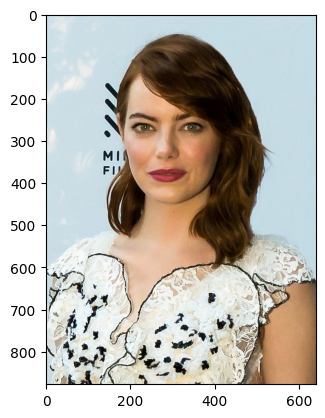

In [4]:
image_array=base64_to_numpy(image)
image_array
plt.imshow(image_array)


In [5]:
len(image)

159696

In [7]:
import sys
sys.getsizeof(image)/1024

156.0009765625

In [15]:
image2="/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAHgAoADASIAAhEBAxEB/8QAHgAAAQUBAQEBAQAAAAAAAAAAAgABAwQFBgcICgn/xABKEAABAwMDAgMGAwUGAggFBQABAAIRAwQhBRIxBkEiUWEHE3GBkaEUMrEVQlLB0QgjM2JykiThFhc0Q2OCorJEU3PC8DVUZJPS/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/EAC8RAAICAgEEAQMEAgICAwAAAAABAhEDITEEEkFRExQiYQUycYEjQlKhFTORsfH/2gAMAwEAAhEDEQA/ALXvNpyAERcwiCeey5qr1FasPiqD5FUn9VU6Zlr5+a+Y+Gfo6e9I6i5NNo8PZUXVWkz9lzdbrGlBAdIKzqnVgc7w7oKuPTyb2S5tbOxdXDfEMBN+KZyXY5XEnqO5ePBTdPb1UJ1bVqpOyi4n4LRdM3yym5eEd5+OpUyZA+qTtYt2fme2fiuC3a/XOKTge09lINC1+vBc/aT6qHjxx1KRccWWW0jtamvWrJO9sfFUq3VVq0x7wfIrAo9G6pcODX3ULRZ7OWBu6tfVXf8AlgKHLpob7jddLnkKr1pbtcS1/HqqVx1wI8DT8QtRvQmlsAFR73Ge60LTpLR2RutmO85WMur6ZPSbLj0ORr7mcXW6vvXn+7pPIOQFANf1e4JDKL16nb6HpFtijZUWwOzRCsNtrOkQ5jGN7YEKZfqEOIwD6KK/dI8jazqq+P8AcWVd8/wMJwjb0r1ld5Fo8er3ho+5Xrwq0WmQRj0UZu6Y4AWT6zM39sEUunwRW2eWUvZt1HXcfxFxTpjuQ+f0V2h7Ja7s3erb2+TKZB+5Xf1bsAgtdHonN+WiN4E+ql9R1clrRrFdNFHHW/sh0phmtf16g9WAFaDPZp03Tb/2eoSOd1TH2hbr9QJ5qcKu+/MzvWLfVT/dIa6nBH9sSvb9I6Bb0/dnTqDtvG5od+quCx023A9zaUGOGJbTaMfJU36gJI3qvU1NuWl33UPo55P3M0f6hXCNN76DcbRIUbrikMNaJWNV1Nogbwq9TVB5/dVH9O8smX6jN8Gy64ZJ5gKN1y3kQsB+rDPi59VWq6qe71quhSOeXXZJHRVbs4h6qVLwcl8+krn6uqlztpf91Xq6nEeKVpDo4x3RD6rI+WdBUvABkqtWvGRIcsCpqYd+Z/Hqq1TUgXS2pA+K0WBJ8EfNJ8s3ql6wZJAKpVr1hLjglYdbVKYy+q1oHmVRra7aMJ33TCD68LRYXJ6M3lS22btW9bxPqqVa63EzwueqdT6eAS25afUnCoXHV2n08Co50+S1XTyfCM5ZYvydJVuWnMwsjU3iowuDpEcLDr9ZWgG1oefkp7PUW6haGsWECSMqpdPOKtqhxyJukVHc8Jn+IQ0SFM5mZAQbSDAK3itGLfsg2EGc4QPDj5qwWGCJUe0jkqqGnfJC6mXHAQOawiSCSp4cXHxQFC5pJPmh2w54InNHJUT6bj3Uxk89lG/dOCp1YiE+HwrPv2AASe60u8khUdQBLD3VXehNGSQQ4uISEmSDCJx7SkAI4+K1aIGGZCKAOSkInATu/MMSk/wUmMQDwUIa4YmQiP5gJCWUccBbYJjsmBBPfKkgOCENIOXCFN+AvYxBIhIgAZdz2RAEnCTg2cOmUqobdgRB5n0QnxcjhGYbGQlHOUdo9eSNzARHkhNMYDuVJ4iEhAmU1oK9EeG8kj4Idu7hG/JgQlEDdICKTJcgCIGTlMaUjcHfZSSSMiY7qNxwc5UpAgA0nCcNMhoCkAG2ZygMgh0jKrut0UnQLhEguQuA580ZAOSUziDgJWDjewTACEBqk4EQgIzCKEgXNPYwmaCRJMeiKZTFpHMKkkO/AG1wy04TOBaOQSpDxCY5GOyTbI7VyCW45GeUJAAxAKMwMgcIXODhJEQhNA78ACkSTgfFAQQSI+qn7T2Q7Q47iQhvZSVrZFEQQkWgeoRhgMgEQEJg+kJptk0faNL2dahUINa9aI85lWmezylSE1rkk+i7B160DE/NV33jTIleY8/UTdWetJ4FwjjdR6WsNOoOqiXP7A+ap6TplGtXFOpQEHhbWtXH4iq2iwyG5KfTKbaANQ8nhXeStsnvx9tpFtmlafbhobbMkckjlC+0oFxNOkB6AI6txPxUTbo8ShYJz22Z/WKPCCbQDclsKdlNv5vLsFTddHzQm9yM+qPpVWxfWvwbFGqGOgSCpXXojZvXPVNQPZxUb9SBEh2Ul0cOaFLrJezedXZODI+KH8cwHBiFzj9TaD/iD6qF2qU//mt+ZWi6RJ8GT6mbW2dM7Uw088oH6mAYBXK1NZpAwajR80FTXrdmDUGfVafS+UjN5vbOpdqnKgfqZmN3PquRrdR2zTmo34SqdXqeg04JPlAVx6ST3RLyfk7R+pY8Rjyyo36kTMOXCP6rJw0H5oBrzqv/AMRtnzWv0c64J+Zo7h+qz3z8VXdqwH5nD6rmGirWaHi5LgeYQONB0t/EOJHOVn9Ok9ld3k6CtrdNuTUaPms6v1Dbh0ms36rFuLK2usCs+fKVz+qaRXt3E0nlzVcOnhe2Jyb4OsrdSWrfzXAHzVGt1hZNMCpK438Dd1MbHE+SdukXrse5Mro+lxpcjvJ/qjoq3WluCTTa9x8lRrdbVDOy3+rlmM6fvqs7aUgeSuUOh9Yrxss7h048NJx/QJfH00P3MqOLNPhEFfq+8e6W0wAFSq9Tak6YeW+i6i39lXUdcAN0q7J9aRA+pWlb+xfqKo6HWgb/AK6jGx91Mup6KHlGi6PPPlHnjte1AzFZ2VC7Vr5w8VZ5HoV6zR9hepFu6rXtafnLnO/QK5/1NaRa/wD6h1JbUSBEBjQP/U5YP9R6SPCv+jRfp+RctL+zw2rWu6z/ABvqGOJMqI2t1WkMpvd8ivcKnSfsv0obdS6vty7uG12T9Ggqu669i9iNrdVFfy3e+cPs0I/8kn/68bf9DfRY4fumjxQaTqDvC23fnuRCNvTmpugGg4E8A4K9fqdfey+wBp22hVLstMtfTtQGn51CD9ln3Xti0ljiLDo4CRh7q7WH/wBLD+qF1vVSf24X/Y1h6SKtzPO29EarUPhZj6roKOinR9PbbOJc8eJ04yVJfe1fVK9SaWkWdGDjc59Q/wAlZr6rd61ZUr67ZTbVqtaSGNgceSzyZOrnXyRpDf0yi/i2zKfBxxCiLQ4CFYewxB7qPbtkduJWyWjhvwQw7gNkKN0AwQrABg5AULhGUrVgiJzQRG1QO8LiAOPNTOJnMhRVBieZSf4Kr0QGCSMoHY4UseaEwMd1VIVEJA7iVT1CPd5CvOEnCrXrR7kkjKluh6MRzQcpo9ETxBwmBM8QFqmZ+Ro2mSOU5jgp8HPklHrKLAF0dgEgO8py0jhMAPP5Juq0F2OAOzvkm7+qYkzAKfKimUOZ5SJHCQmM90xBMRiErXkVWMQBEj4J/CMu7pEkGExmVXKChHd54QgNaPijbPdC5oMghQ9aHutAkTBA4TEE5IShwO0cJcdj65RQWCXbpBKQDQ3ggIiGnt3TFs5lO0uA2AY5xlBDe6J3hTN54BRyDewe8ymMTkqQ+M5EwgIiRCafsSYJIHAKLkQfLsglsEQm3dkdthdDkHACaZ5HCcgQh2lw3ApUx2MQDkIcdgZRERkFC4E5n4qk70JoWCmIa78zhA4CTmEeIHKRMt4AKGhp0CSd3GEsxHZEwQ3PdNmDxPxS4HpgRDpCQgnbhOWAiTMoXDbEYwnomSdH3Wb4EDMH4qGvfQJD5XE/ty9e0EOWno9xXvHH3kEBU+k7dmiffwaJcGzUqES45JSOqWzGhpqiB2lZvUVZ9Oh7lhgu5jlcxFd4MOOEYemWV2Vkn2LtSO2drNAiA7CrVdetQY3gLA0+gKvhrE/BVriyrVapFKm6PgupdNCDqzmcu7g27jqKgAQCPSFnVeqKjZFNsqqzR7xx2im7PorNLpe/cY907P8AlKpQwx/cwjiySfBWq9RXpb4REqrU1e+qY96QF0FPonUXwDScD6haFD2c31WD7oTzlwSefpsfo1+myS1RxFW8u3tn3zpUTKlw7AqOleoW3smu6jtz61JoPIIJj6LUo+y3TrUk3+r27AMeFkH7lZS6/BHgpdJJcnjjmVnuBBeQOUhZ3j8NY4g8cr2YdJ9C2YJr9QUjHIFan/IEp93syswGOrPqkDILajv0AUP9Qi19kG/6GukiuZI8aZo92XeKm7PdWGdPXdV21rSTzAXrR6o6FsyfwGgPrkDD3UmifQ7jP2Vep7T7S2dFh0rREcbqrW5/8rVL6vqJL7cZTw9PHl2ebUOj9RrP2to1SZiBTJn7LTpezLXajm7NNuSD5s2/ququfa11E9sW+nWVEg8ne7+YWVce0rrOoS79qUKQjhluwfqCmp9bkXCQ76eK0myzaezfqFlD3bbenRHEvqCftKntvY/qm/fWvLenOTG538guXvOtOpq4BrdSXxHkyqWD6NhZV5q+oXbYuL+5rT2fWc79Sp+m6qW3JIaz4lxE9HHsy0qxJdqPU1vQnza1k/7nKJ+gezO1A/HdXUKhbyBcs+4aCV5NV3uBkYPoq7qdRwIk/JNfp85bnkZL63t/ZBHqtbVPY1ZwHXFW62mIZTqOB9eAqdX2j+y+ydtsOkq105uGl1FtMf8AqJP2XmDraqcCfmhGn13ZDJjvC0j+l4uZSb/sn67O3qkej1/bjplvA0/oimwjhz67RH+1izrj29dTVZFppOmUR5EVH/XxAfZcX+xLqrBDCZ7ASrVDpHUKpbstKjifRV/4/o1+6N/2S+q6iWu5mnee2Tr26JbRv7a3b/4VozH+6Vj3ftD67vmkV+pr74U3Cn/7QFtW3s71WuWj8K6mJyXtIC2LP2W3AINe4pNHkGyU1i6PFxBCXzT5bPNrjV9fvhF1q2oVvWpcvP8ANUX2FasQ5zS4+ZzK9qoezXTKZm5qOf8A5RAC0LfpDRLUEMtWOjz7JPPhX7IlLDJ8s8Ip6HeVIbRt3mewar1LozWLgBrbVwJ8+y9xpaZp1tPurWmJ/wAsotjANrKbfoon1rr7UXHp00eO0PZvfuaPeeE95apmeztzbkUqtbw/xAYXrFRtR37gA8oVWpbuJALBk+S5n1k/JvDpkvB8763ZCy1O4tWHd7mq6nI77TC661pvZpds15g+6ZP0XOaswO1i6fUfINzVJJ/1lde+mWW9Nu0CAByurqJfZE5Yfa5WZjgJ5lReIOjbhW3NIPHKie0zAXPonVlR7ef6KGo2eRBVyowN4mSoH7RzypqxFV2QYyq7m54gKy8YhpURxylVcFrghc1o81G/BEKZ49YCBwIIJyFX4FwQkk8qteN3UiB5K4WtI9QoLgA03Z7KW7BVRz7wQh9RlSPjeYQZC2XBmxwBx3KRaWduUgAcyiJJjIKGtlJANBcT3TuZBHeUs5gJx4TMpPXAAnwmAJKYNgYTmT4pwk0EzCVsKYxJAgJTMSE4b4iTwlDuEloEIRxKGSXQpNo4xKCI7Jcg1YvMEIdxJzyE8OJk4+CRAOPJFCbYLnEgy1CDCMg+YQlkmSYlPSAYQeTyhMboHwREBuNyGAHeL9EuBvgRgNJIz5KOADKMwXDumIAb4kuAjbADoPok0h2UogTI9EMH4Kh9rYnbcjCElvYJyGt4MpiADjhFACAeU7tpHhwk7PGExa4BLkVUCfyxEoXO2gdijz3gpOAdkiQi6F3DGU0N5jlJxiAExd+73VJ3wAxb4ucJwPLgId0naOU4kCSYSab5NFLQzhPohJ3CAZCJxkSTEoWgCShEn2m32d37WmpWpFoHmVYsdAuKMNoNAkwuwvr65cz3LXkl2CIVelScx4Y0mfQKJZsz/cd+OEbMZ/RT7xwfdVWyq930vpOmMNW4uGtHnC611N5/eK4nrO5eHMs2v/zOWuCOSUlFOjPNkjjWkRvf03aN3F+4nGENPqXpelhtjVqEd9gj7lcpUDqrtpdICFtBk4ELufQ3y2cL6ualpHXt640ykR+F0VuD3qAA/QLRHVurV6ANlptrRa7u4Fx/UfouJsbJ9xc06NNsuc4Bd7+E/DW4GIYIlc/UdLhxpKrOjDmyZE22ZV1rXU1XLrijTjjZSH85WZcav1M4AftWu0dww7f0RXfUNJtR1NtMkicrKraxVqE+7YAqx9N57URPqUtWw61TUqz91a8rvJ53VHH+amNzWDAKjxI81nmvcVRO7Pkg2VqvIM+q6l0/4SOf5U3Zaq3LXyatYFVH3NGeHH5p26bWqGQHFW7fp+8uDFOkXfALRY0uWPufgovvNo8DCFAa9YiRySuntuh9Wq/mt3Dy3Yla9r7Obske/LG+fcJXjRNSZ52adZ5PjI9ExsaxE5K9ao+znT2Qa9wT5xhaFDpHQbbNQU3kfxHIUPPBcD7H7PGmaPWqEBrCSPRWKPTV/WqeC1qO7YaV7R+B6fpAQKQA7TKc6ho1GGsZ/tZCyfUt8I0WNs8modCatXkfg3NjHixCv0fZhev8VV7Gj0XortbtTPuqD3R5BCL2/uM2+k3L5yIpOI/RYy6iS80arA/RxlH2X2jSfxFaoR2ghaVr0FpFBrQ6kXbf8y6P8P1XWgW/T9cTyXiP1ITN0PriuJFlaUh5uqNn9SuafVPzI6IdNPmjKo9O6XaSG2tOOQC0H9VMLKgwD3dNoHMQtBnRnV9Zn99qNpSk+ro+jUX/AFd6m7/tHUYgjOyif5uWE+qxrmRsukm+UZsU28ua35qCs+hSJ97XYzHLiAtv/q1085utcvH/AA2j+qTfZ30ywRXq3lb/AFV/6ALJ9Xj8WafTtatHMVb7TmmTeU/XxT+iq1NW0loLjcg/Brp/Rdy3o3o+kQRpjahHd9R7v1KlZovTlt/g6NaieYpDP1Wb6q9KLKjiS5kjzY9QaWcUxUdiZAGPugbrVR/itdLuKomJDHH9AV6e78LRI9zZ0mf6WAD7BMLqscNYY+JUPLlfEC+3Gl+480FXqCu7ZS6duCSJaS0gfcBQ1qfVUFjtNpUHA43RP6lenPdUJn3ao6xQa3TLy5qEN93bVX7hy2GHKX+eXCSGpYYrds8UHsupmq65qsoOfuLiCSQTM8wsPUrcU9u1pELA/auq3d3Qbc6neVdzmAh9dzpkjEErqdTaA5rTPHC7/p8+KSeWVnm5M8MsP8caMJwExwo3tcZAbhWqtLBgcqFwwQ0HC3aRx2Uqm7iFXePJqtVS4E+SrVMOwDKloF+Cs8GSgIjI4UrhOeFGQI5Sp0Xfghc0EyeAozJw0YU7jB2gH0Ub2GOwStJ7H+CHY4Z81DWZuaQPJWDyWkFRVWhrSQeQhjSRztdsPMDgofiprgf3hAUcYWqba2ZvkYDEN7pbdvOfgkGgDun290mIEiCkUT9pAjnumI7kIvQ+BojlCSQcBPnul3lKmLkeDBKYSk4d0u2OfNSxpWIiPzBMfF2TkSlHxTTHJVwMdzSI+yH7SiOBJTT5ITQLSAcHDjhD+YwQjJJwQmgbpIhN0S9jGZ4Qk85ynmCYyhcADuI5SHQLmkZEpi13IOPJPu7EJnSMj7ovY4qhnbeIkoCZwicd3xQnJgHtlH8jpvSBMERGUxMIiQM5lCSXCExNUOHGEPnMlOYIgDhNndlJomrEY47IcgcooAExgJnRtjhLuKoaEA27iT2Rgt7ShPOAhNieuBjHKEB24zkIghBkkFyoEl5FDcyeEDnZwMIywkxhMC38sZRaKSR/RB9APuC/kN/VXLWzcCapbM8KG1urX3Y31AHEyVpjVLKkwNaZA4gKe2XdR2d7jEq1rcNpuqO8IAk/BeSavXde3la4djc4wPTt9l6lrt6++06ra2bKjH1Rt3RGO/8ARcW3pC8q+J7CF6PSyx4rcmcWVTycHIe4kyf0Tmg7fgHC7q36Hq1IDoBPmrtLoMAQ+qxvmSF1S6zFFcmX082cz0rppfcm5qDwtGJ81s9RVnUNPeKJIc8QIXR6f0db2rCDqQaJzDOfuobvT+lbaq6lea0x1RsTT3glvxABheblzRzZLXg9CMFDF2vR5MNOuazpNJ3i7wtiy6UNYA1KobHovS9Iselr6qaNsDVLRJw4CF1VloOiUmkN02iQfNm79VrPrpJUomEemxtbkeN0umbanDXvg+UcrTtumqJINKxr14/hpl36L2GlbWlOBSsqbQPJgCsyTxSaFjLq8svBounxryeX2XTt3EW/T9Y+rmFo+61afTvUlRwbS06jSaO76jYH0K7kmtwNsJwKxxvwsnlztlduKLs5JvSnUNWA+8tqPwk/yU9Loi9I/wCK1wj/AEUz/MrphRqZO8pOoOjJMqGs3sali/4nOHoXTyN1xqVw/wCBA/qpW9HdN04LhWee5dVOfpAW3+EJPBSFmXOIhHxzenIpZEuEZjNC6apna3TKLv8AU3d+qlbZ6ZSM0dNoNHpTaP5LRNi0DDYhGy0hv5Zn0UfBrbZSyyRTFZjG7WW4aOwGP0ULrioHSGD4xK1BY7v3YCH8BDvCMKfpoehrNP2ZL69y4+FgHyUbnXThEkLb/BAfuITZtjLU108F4D5pLyYhZcEeJ7vhKhdaPJ8RK6D8Gw/u5S/Z4OFccMY+BPK/Jzv4MyZnKQsSf3V0J0wnAn6JDTHgYB+ir44vwHfZzjrPERHyUbrLMwuldp4A8Tc/BALDuc/AJdngFI5p1iAcCfkjpWEkSMLov2cHxII+Snt9JnJEjsj4yu45evYHENWJ1pam16L165bgs0+t282x/NeiV9OZvjbwuQ9sVFln7L9erMAG6lSpT5B1RoKrHjXcjPJOoM+ONLovfq9nTAJHvmD7j+i6/VtpqztyAsXQaDDr9u1zf3zBmIwcre1Vk3LguzrF/kX4ODC/8doxqjCAQcBVKkN4WnVY0NIJWdWBgiYWDrySuaKVXaTgcqpUEcgq28eKCq75aZWdGi/BXLZBhREfJWXAnyULmtmVDbKX3EEkEg5CFzNxyceSlPMEBRuxKVWOqIXtjMqJwBB81ZcJbMSQoXg5hC52HJz9wN1V09jKjcf3YxCmuxtrEnsVA6CQZWyTaMpOuBhjM8JQXZ3Jw090iC3IOEmNWBHIBTgEiE4G7OBKToaIBlFaE+QCD3yn2wE/rCRO7mEtpFIECQcpk8IjGBtSGxgew5TS4nyT/AoSCDlVXshWImO0pt4ngfBPgjHKAtzlS0NDudmYQF09kXKA+EyQlQOxEkDPKBxM94RuEZBQkSDCNIFaBLXRBKAktgHj1R7nZBHCEzEkj4FHkNsYkkkgYhAA4GSpC04BEBCTjmPRHdQ465BdMYQbiM8IzM+iaPIp2UxoPMoSYnHKI8JjP5UrIcQHEnHZLERzCKMFCcZhD50K2gdxb2hNBJBPkpIkGQh27eVSY6BzHmUjIbhseaL4YQ/EoB/kFx8QI5SDjniUzsHCWTBOEJaCOj+nGndN2rn7zTBaD/CtodP2zGwyiAfOF0WlaQ2lbgPHiOThU+q7inomjXV8fzMbDB/E84AWmLF8jSZ0Zs3ZqJ5J1B1JVo6hWs7BlM0qTtvvCMuI5+UrAdr+qmZrEH0AygrB9R5e6SSc/FRmliCAvV+lxR0keeuoyeRP1fVKhj8ZVBPk4j9FasHXuoXbKNS4q1B3Dnkj7qoKMZ25XS9LWQJdcPZxgJZIY4RtIvA5Tmtmhc/8LaOqbo2NJP0XnVem6vdvrjJqOLj813fU9fZbC3pwPeHPwXP6Zpj7y5ZRpMl73BrcTJKw6SPanNmnUzc59h2Xs30DbaVb2rTh1VwYyezRn7n9F39Kw922SrfT/TrdL0+hZlgLqVMNcfM9z9Vp1LLb+6s5/fJtjWtIxGWgIMhOLYzBbhbYsgW4CTLRxMBix7d6NLZimzPMJ22U8hdA2y7EKVun+KI5T7RdxgixO2A0BJtkYgtldJ+BaeFEbNjTJOSjsDvowxZ5/IE4sYMbQtiqbWjIq1qTf9TwP1VOpq2h0Xf32pW7Tx/iA/omsbD5EvJX/BCBhTNsBH5OyjrdT9N0gC3UW1BzLKb3fyVR/Xuhtadguqn+ikP5kKnjb8B8iZf/AGeQOJlAbD0WS/r+1cAaGk3VQnjcQB9pUX/TPXqjttt0pUOMEueQf/SEvjfkq2/BuGyxEQVG6z5iPmsM6913cDdS0C2pgnG5hP6uCr1f+sm5bO6zts/wM/5qXGK5aKSn6OjFmO6d1o3hrSfkuZPT/tCuRFTqCpSnnZP2AaoHezfqq/qTd69ev7flef1cs7x+ZGihkfg6t1BrT4vD/qMKF2p6LajbdarYU3Hs+4YD9yubb7Erio4vuL26q+Ylon6kq3Q9imnMZ/eUqsHzrkZ+Sl5MS9v+iviye0Wa/V3R1vIq9QWWOdr936BUa/tD6HZluovqHyp21Q/cgLYtvYtoraIqVKFtGR4nPc77q3Q9lmh0SALO1aPMWwB+pJS+SD4ixxx+5I4i59qXS7CRb0L6ufSmGz9Sq9P2sWzRtodNXtVx/KPeNE/QFemM6F063jbSMjHga1v6BaujdCaTd1xRrU679wMf3xGQCe3wS72+IFKEPMzxuv7ROoLgF1t0U+lPHvKjz/8AaFzPWGrdY9a6BV6cvdCtbazuKjH1C1xDztMgZPEr6Hr9FaVTfu/ZrC2ZG8kyPqvJ/wC03bUekuhdKudDpDT729vnNdWoHa9zGsyJ5iXBVD5sk1CEUiZvBGLcm2eFf9W9XRSdUFs1jARTJFQv2z8eFzOr0S27qsAyxxb9FZ6X1jV73Vn0bzUbu4pGk4ubUqlwkRByotTn8RUdJy4n7olhzY8jWWVs5subHKCWONIwbkOjnhZ9YSOVpXROcYWe8c+SJcbMYeyi6CZIyVE/0CsvzIhRbTxCyK3eis4CJjlRPpjb5FWHgA+qiqDEcyjnZa0VyPPKAiDICmc2OT9FER90uR2qI3AQVDUHMHspzmZEKGq13kpS2SnRz960Co6cqsMDhWr7/GJPmqwgnut42kS+Rhz4oj4pbpBxhLbnhOQNshAkDtHI4TOBgEhE1sjvlO4tGO3khsCPMcYRHc0ANCYGcAYTgiMmISdgmI5Pi5TQI5RADzwmloEKdjtA7e6RG4QBlOTPCQOco35DS4BMtAPmhIAzKkcW5JKjcO0KedjaBdkcwmiRlI45QlxaezkxcDEA8cBDDhMFHzPZC5oaOAi/Y+QCDiAm2RkFESR4kM5lVYnoYnMZQvA4KMlhJjlRwJwfqlQcjEiPNDgnvCPjAKE8y4R8Ev4DyIwRCEckBFG44QwZklPQ2IRmUxA4lIye3CbvjuihKxERgnCFwzubz5J3QOTKUiJCFoGMJmQITFgbkp+O+U0zgnMJtN8BdEbtxMAJ4O2DyncdjQOUIIEgnCN0CVn9km0PdAeGJErzD2uaoyrXttGpv8NMe/rQf3jho+Qk/MLsa3XFID+70uu//UQPpyvPdW0m71rUK+oV2u3V3l8dh5D5DC9XplDG+6RjJSm6Rw3uQ44bICjdRaDEFds3pGpAG0CfNTN6MB/MWD5rol1OJeSV082zhKVtuexonJXcafbNtLRlNsYElaNr0TQJl1w1sd9sqzX0PTrGluudSgd+y4uo6mE/tR14ccsSZwGtMrXd2fdgkAxxwuj9n1haW2rsutRqNoU6TS4OcP3lq2tr0yXya7n5iNrufovQ+mvZvpus2I1Gi0NpkwNwdJj0lCz9kO3tZl8acu5yBf1V01bgN/G78Z92wn+SoXHWmkk7aFC5qHy92B/Ndrb+zDSqNJr30WEnzpgx9Vet+idPa6RbN+TQFKyKqUWUoR8yPNx1kHy230is8+ro/QFO3qDXnOi00FxPPiDjj7L1pnS1kxu0W2CMiSrdDp6zAn8I2BjIwkpTfERy+NeTx9t91tVdtp6ZQpjuS3+rk4tOuq7z/wAXRpDuGx//AJXs37BoDigxvkNqcaICcME/BO8r8JE92L0eN/8ARTq28d/ea1XBP8BcR9oRt9m2pVc3GpXTp8mkfq4r2dmjvbkUiPkiOlw7JDfkl/l9i+TGv9Tx6j7KmNBNSpWcPLcG5+itUvZbpwH+Bug5DqhM/ovVzZsLYcwk+akbYNDYZTgnlJwyP/YtZUv9UeZ0PZnpLSHGzoessmPqVdodD6bScQKDBMflYB/JegHT3+7LNsE+Sdmj7Wy5wlT8DfLK+d+DiB0nYUTm3cfQn+ilHT9q1v8A2UEjiSTC7VtgwyKjiT6JNsaIOGnCX0y8g+ol7OMbodNp8Noz6BTt0sU/E2k0HzAXVPsqbvygz6Im6TTcdr3Qr+CK8E/NJ+TlH2bgS9zS4oPwTts7DldbU0ZuQxFS0mq1u1sHyQ8UUtIHN+TjmWz5y37KyLSn+9TldQ/Sa8x7reR2DVXbYBxIfRIIxwhQj5H3N8mA7T6TgNp2hO3SnuZ4chdJT0kVBhuAeFpUNHotGW7DHMyFXakNNs4c6O8GdhB+C3OnNJr297TfVptaHU3uAOT+UkLbdZbKppubIb3AW707oDX3YuKlXdSNN0MA84HMpdug7kjzrUNPqe/dSdTJcPNsL5x/trUXWmkdH6cQ3e511cEeQPuwP5r691PTKrtUr0yC5rHkNns3svkb+3c13/SzprTngj3Wlmpt4LS57h/9i6ejg5Zoo5uqyduJ/k+Yei7dx1O5eIgUdvzLh/RV9TDHVXbctnB5W10hb7XahW7NZTnzxvP9Vj6htDoaAFz9V/72KDvFFeTCrtkkKjVZkicBaVYGVUrMBMQVxyts1iii9scKBwgTHJ4V17ZH5QCFA+mAZUX4ZcdFOowTKhcIxhWnNJnlQFhmSEVY0myu8QZhRPDSeIVh7GzwVE9hjMKRrTK72z3UR2wW91O6n5kFQvZtJI7pDaXJgXw/vnBU3DsBC0NQYBVkgwqToA+K0i2lRlLkjLQOClkDBAlENnB7JmsJn0VIV9ozeTmEp83AJxIdEwEjT9fsjTGmmDtGC0hLYSI5SIBOBARO8gcBDAENkQTwgMQPNSg+EhLaAPEp8gmDMQNvCEtLZLnYRSDzwhOcSh8gDhx8kLxH5coiDgThMY7FKhJtkc+YhDEqR3iHHHdNJ25SKu9EJJ/eTyYhHBzMITP/ADT5E9cAuMCICjInnjzROB7GfmkHeEgCEUG6ADexGEp2E4lFGJnCZwjylA98AbieQACmGDg5UhbLY7ISAYE5Qw0RudnJIQux4gDBRkCZxKZ0kdoPkhCtMGQ4coZIAPkUUACExjgpj8AAlxmPqne/w5Ej4JwJxiUiQMEpP2FkQyAAEW4SngtEBMcDlX3CsYncORykcdwfknMcgoYLjEJILP69+022sOm7G1o6e0i7uKjiNxn+7byY+JA+q81dq9+XSaxA7wun9ouqHWep7t1Ot7yjau/D0SOCG4JHxMrkxRMnHC+h+ljCKTWziWab3ZHWv745/EPI+KgbVrkEuqPz6lWjSJ7I6NoatRtICSSl8cV4LWWTZqaDRqttzWqOdk9z2UOuvdVcygAfMroKFqKFu1n8IWLUoPrXTnumCcLjjjWTJbOrNPtgojdN6JU1DU7axos3Pr1A1o88r6ss+n/2RplvZU6OKTAzA59V55/Z16OZq/UlXU7mnNvp9MO4wXk4C+jb/Rn16jPcNYGjmcQqnU59voxmmoKvJwg0avWDW+6IAHdWqXTTmgbiAe66+hoWw7qlb5BW/wBn0QIDCT6pdjszcqOQGiMMBtMuI9FMNDIEPDW+YXVtsQARgfAJjpzRmNx8yVbglwQ3JnJ1dNptbHutx7KA2TmQAwNHbC7B2nziMeajOkAmCR9Eu0LkchUtgBBkk9goBZ+8fApflXZnRqTXg7N0JzpdMnwU9p81aigv2cczThJlhHyhWxpDiwOLSAunGmgHIClFg0N2yPRJwXgfccqzSHGQ1olH+xjTaC7a4n7Lpm6WwP3Gofgiqs0yiwmvcU6YGSXPAwk4WUp+zlDp7Gn/AAwfkk3TaUyaRWzV6h6MtgffdQ6a2OR+KZP0BlUK3tG9ntoPFrVKp6MpPf8Ao1NYZvhMPkj7Iv2bTEf3XPpwnbowLg4UiZVO79svQVsC2mby4H/hWpH/ALoWRce37ptgJtOn9SqkfxhjP5lH02V8RBZYeGdP+ww1wDmnI81YpdP02AOLgSey89ufbtc3LibToas/yJuzJ+QZH3UNL2te0e5bssOhaRnDXGhWf/MJ/R5n4LWeL8M9Lfo9Wk4bKZ8XEd0H7PbUmk6lnvheb1OqP7QGo7XWug07SOC2yAn/AHkpOtP7RN+2H3zqAPJHuGH7NlNdE/MkP5W+EejDpsVGzTJa4OzjEKU6JXpMPg3ERgd15i/2d+3O+n8T1xXo+jb5zf8A2Qnd7COttQcDq/XtR4OXTWrVZPwcVf0sFzNEfLkrSPTqFrYUH7724oU2yJ949o/VSv6t6I0pzjU6n0miYgtdeU5+kry2j/ZkoF2686rqPPci3k/dy0aH9mjpJpm61e/qnH5A1n8imsOBcz/6DuytG/f+0/2VUK7qtXrCxDwdx2lzx/6QV8d/2t9X032k9f0tU6Uv6d3Y2um0rX3u1zQ54c8nkTjcvrIf2cugIIcb55dyXVQT+i+b/wC0Z05o/sq1tljZ6fUubarQbXpEENIaXFpBPcyFpixxjJy6fcqE6arM6R8z2Gk1dMsbwXBaKj2OMg4DQ3j9VyN9BeRGV6HqeuN1vT7u5Zp34QMY+m1odO4xzMDzXAXjCCSfmvGnOcsjeRUzqnGCS7HoyKzByqtRpJxgq/VGZA5VOq0jjCwnoV+ilVaQTBz5Ku9pM/Yq09rgS4ZUFSQFk0VdMq1GmFDUAI4Vio+Bwq9QEHKWy06K8AzIMKKoAO2FYeCBhRObnKm1ZV2VXAEoHNAMSrD4mcKF8mZESm98A2YWr5q8YWbtJEhamq7g8CD5LMG4yrgmkZSByMuCclx4wEi0yM5SMjBJVMlUxy1M6BmTBTAkHJSIxIEoY0PuxifohMT8kRLjAmEwmZKhJg+Ri13IKcglISZ7JszIMptgCGuggHlMWgCMyjl8Z7ptpye3mh34Aj2nhB3kiFKWu7GELm+ZyknQNaAMElARIwZRgTgoTLUMIgnI5TDExlPBOCUIa5uAUMKtglomCUxhuIwe6d53CAE0ENiZKN0N0DM/l49EzZKZu5sjie6QcRgJpE2KZwTACjPMhGRuH6IC0z8EA9idkQGyUBaeBlSsJAMjlAQRmYQGlyDBJjultBOeUUzmE05OOVMm1wCaWwHRPKXbPJTuJIjahLTElCtopvuYi3ECUwOM8og7EFNuxynsQDhABcT8kmtwIPzSkngYTEOYYAyqukD2f1BrUS4kgEk8/FQOoR2K3zpdV87Wkn4ImaDWqHLT9F9LkzJvk4I4pGDStS4jtC09H08uuvekHa0fddHp3RGqXpay106vWc/DdjCZPkussPZH1zRoh1Ppu6DTk7mtB+kyud5VO1FnVHDOFSktHE3zPdW5g5dgLOtrQveIEld1e9KX1Go63v6Qo1KZ2uY8Q5p9QrGi9B3OpXbKFiWvquOGsElTHtwr7uQnCWaSo939ivSzemei7epVp7bjUP8AiKkjMH8oP3PzXbVr+xoZr3lGn28dQD9V5Hpfsf6ur2rKF/1TWoUYANL3lR42+W3dHyWta+wzTWGbrW7ir/ppNb+sqccYVbZU4yb8Hc1up+mrcltfX9OpkdnXLB/NUK3tE6LoOLX69QcR3ptc8fVoIWRbexnpKgZe69qHkzWAB+gWpQ9mnRtHnSBU/wDqVXu/mtawryzLtn7RXre1Po2kCRfVqgifBbVP5hUqnti6YbJp2moVAOCKbBP1cCuio9E9KW7g+noNoCOJZP6q/R0XR7fFHS7Rn+mi0fyQpYV4Yuyfs4N/tjpOJFp0zeVfKag/kDCE+0vqu4H/AAPRFYyMEuqOH2YF6QyjSpiKdNrR6CEUDyT+TGuIf9g8Un/seaHqn2qXgH4XpSlRkx46Th/7nBJz/bLcmG0bS2B7htPH1Ll6XA8k6PnS4ihfAny2eaO6b9rN8d9x1NQt/RroH/papG+z3ravH43rm4gnOypU/qF6Okj6ma4S/wDgPp4Hmg9jbq1R1W96ou6pdzLS79XKaj7E+nmCK+oXlX5tH8ivRUkPqsr8lfBj9HE0/ZD0eyC+jdVIEeKuR+kK5S9mHRNJ+/8AYdJ5/wA73O/UrqklDz5X/syljivBgUOhOkLcRS6csPiaIcfutCjoWjW3+BpNnT/00Gj+SvpKXkm+WPtRG2ixghjGtHoIRbfgiSUXY6B2lKD5okkBQO0pbSiSQFA7SltKJJAUDBXxl/bVu21upaFFxEW9nTafQS933n7L7OPC+E/7ZV773rq+tg6fd06LI8v7tp/mfuvW/R0nmk34izzv1G1GKXs+dPdup6BVewHa8wP9wH8lyd5MmOF21ZgHSlJwOXuEfOoT+gXHXQhxEhfO595p/wAnpL9kf4MioSAcZVKsPNaFwBlUHiZk4C55An5KjgQZDvkq9ZpnlW3huSAq9QdzhZSKbKbwDBJhQ1DAj7q09oJVZ4jEcKdFq7K7xOZ+SjdyBj4qZ0SonbfQKGkhvkrPZnCjfPcKw8ADmVC7ngJrkdoxNYB3gyskjvOVs6xGMcrGcWh04K1gjObGdJ8IHKRENDYJhECTmITR5GFdCGAa3vz5pbSTO7KQgiHZhEfMKZJCumAQf3UhJGWwUjDXT5pidzcdk60U2MCZhLjE5SjA5SJA5MJUFsceLuk4HtlL1Bj+aQcJjuloAJcCYjCEtJBJKkMfBA4yICl8jsjLQ0SHZTEg8oiAQhJxEI5FYBkcQU3fJREQ31QEEiBhVSExi3uHJEEDt8kjxCYwREQVNUNaVgFhPdIiO8p4AHOUzgIndKLoVgHHHdDtI5zKMmRMQgI2iQZTTsYMCUx8iiwULhGRGVYm/Q26MQkeOICTjIGExMhJxBfkEj1wl2wEThIhC4R3U0NP0hszHbugMB0AeikEDn7oSR+WPmqSQmx+BgTCAy4zuRMgiAZhItaDKVIbdn9bTq9YAllCmP8Ayqeyv7+tVa0bRJ4DVRFIEwBkrpelNIN7f0mbC7xNgATmV7+WOOKujHp3PLNRPdPY5olzTs36lduBafDTAHwk/b7r06AOyzenNMbpOkW9mGBpa2XAeZ5T9RaoNF0W81MiTQpOc0Ty7sPrC48GP1yzp6rL3Sb8I+e/arejVOtNQq0SWspvbQGeSwbSfqCu19hXTrm/itfuGk7R+Hoz9XH9B815s63q3d6C6aj3vjPckr6R6R0VugaBa6cB42t3VP8AWcn+nyXodZSagvBy9MnGDk/JspJJLkNBJJJIASSSSAEkkkgBJJJIASSSSAEkkkgBJJKK4ure0pPr3NZlKnTBc5z3QAB3JTSvSE2ltkqB1Wm0w54HzXjPtQ9uNnp1NmndJanSrVXkivUbTcdjfRxgA/CfkvB7/rzVbis+sL19MGRAe4mPiTK7sfQtx7sjo4snWJOsas+4A5p4KUjzXxt017b+remSwWupuuKTeaFwd9M/ImW/IhdrR/tT6xsHv9DsNwGSHuA/VD6CTf2ST/6BdckvuR9KSPNOvnGn/anvSQ52h2RE8Cq4E/Ard0r+1L01cQNV0S7tswTRqNrR652pP9OzrhX/AGio9bjfJ7ikvG77+0/0RRa38DZahcOdnxNbTA+ZJWFqX9rTRqTCNN6crPqf+PcNYB/tBSj+ndTL/X/6B9dhjq/+j6BSXzVbf2vmtuQb7pmm+3iD7i4IeD55EFaFX+2L0lTrM29OX7rciXPNZgeP/L3+qb/TeoXC/wC0Jddif/4fQjjAK/nV/ai1F+o+0PVw1wlt5UaJ7tbLf5L6Tvv7Z3s4p2dQ2un6q+52EsY6mwDdGJO7hfG3XnWWg9V6tcatVdW9/VrOrOLogPc4k8f6vsuzpYT6CE8mVVapHPmlHqssIxfBi6pSNPpe2b7qNuyfTwuJXDXLBuK6rVtdoOtqVNty075AE5jjhcxelk7m5BC+Xkn3OXs9hqNaMq4iSFQqeqvVw3mVTrGDxhYyaomLRUqDaCeFVqSQrdQEqs8GMZHqsHwVZA5siQq9VsY+6necEcKFzcncSpdl8laoMbdvzULx/kkKeqSTiAonOPHCnbB3RAWBRPDTwp8cZURLST5+SNofBjavG0T9Vi7fmt3WWxTacFYZAnOFvCmSxTIlMdrhEpi0EjEpmwCdwiOFpSITFIaIaceqfIHZI5MgiPghnMyFHI3QoJ7YTgwIRTPclA8dkCEQIBB+SGQ7kTCICBHZCSP4cJJBY8uIgBKY8JEoA4zjKIFrgJwUNMErEfXHooyRnlE5sGS7nyQkCJlTS5LpAkwUHdERGZTCAUEtDO7ShJOYRYQ8E+qFQv5BILjJKEkjGEThuxPCYtzz2SorTI9wLtqZ0RkI9rQY7qNx8Rjsqq+AaocmRCAxBwjiWiAAUEGYJS8kgjKaPNEWgnCYggwW4VWFDFhzMIQI4x6pzg8YTGOyG/Q0rGcIyCm7ynIAGCmnCXgfkaCTJhMYmMJZCaGtO5yZLoYt28CEjEhOXAxEQg3AHBgoVg68H9d6VAF2B3XsHsc6e/Eaiy4e0llIe8OOCOF5lYWnvKzARglfRnsmtLejor61NzC9z9pA5Eea9vqXaSQ+lahFy8ndAQIXmvtj1n3dvaaJTd/iE16o9Bhv3n6L0l72saXucAAJJPAXz51prD9c167vWA+7c/ZTk8MbgR8Yn5rfo4fd3vhHJnlrtXktezbRP2t1NQdUbNK3/v34ng4B+a96GF5H7L9b0HQqFz+0Kz6des5obFJzhtHqB5r0yjr+j3DA+lf0iHCRJg/QrLJ3ZJt0bJqEUjRSVNmq2FQ7adzTef8AKZ/RSC8pu/I17vgwrPtYvkj7LCShFd54ouTipUP/AHcfNFB8iZKko9z/ACCU1PMIoO9EiSjh/wDH9kod3cUB3fgkTSPNRlk8ud9U3umnku/3FAdz9Eu5o5KE1GCZcMZUZt6R5bPxKjOn2JO51pRJ8ywI0T3T9BO1LT2SHXlEEdi8LD6k680Pp6xqXDrhlzWA8FCk6S4+p7D1W2LKzbkWtEf+QLwX21dddM/iv2ToA33dIxc3NGPdR/AOxdMSe0Lp6bFHLLadGGbLPGuUT697c7q3rG4FZz+Qy2oHYxsj95/J+S846p9tWv6xp9TSa1O1dbvODUa6q9vwc4yuA1G+LtxCwbi53SS6CvQi4wf2I4JOU9Nlm+1IucdtR31WZUvyB+YmfVVrquG+IlZ1a7bJypnNz2ylFRNN+oQfzFQP1N5afGY+Kx614SCZj5qlUvMSXfdSnQ2jf/bL2cvJQv114GKpHzXL1LsTu3KrVvmgnxq+5+WKSSOnra34CA7B5AKpVtfeQYeY+K5mrfTw+VUqXrmgyVXe/ZDjZ0VfX6gYRvOecrIu+oXNaf7x0jvP6LButQkFu8/VY11fOMy9S8rQ1Gjcu9eqvkueQ48mclYF7rL2ztqOHKo1bskEudKyry6kHxLDLOU9M3hHyi9da9UJaHzjutSy16hdUxTc+HCJlcPXuTEzJUFPUalrVD2u9T6rhyYlJUdmOTXJ6JWexx8J57KrW4w1c5adT0veBtcw08mVui7o1qYfReC09wZXk5cUoM6VQDxiQVXeREjlTPJmcEKvUG4ggH5Lmkm+TSOyCoWxjkqE7okj05U7oAiZULyGzCmtaBLZXqAeaic0fm5hSukhA+e0KGqKVEDzmAMKNzR3wpnH0UdTzKHEODJ1loNH0lYJDZzldDqoP4cmMLnH/mWuNETfoWAZCEjuU84IBT9oWr0SDjtkpAxgBLBdAwnd5KXYaGBJKRbncBKUbOCmJdyOUKwEZ5hBG10nhE50AIS6QntcBpDgkztCYtJMkJp80W88SISrRWhnMG31QbcTMoyZwAJ+CBwIUUx2kAWmeExHEjKMz3QOmJITSsl2+AXAznCEtPKPjkoZIMEgI4BtgxnKEB2TH3ROeIxknKEkjMoAYgAEnlRhsmYlS7pGVHug5CcU0Kxi0g8n1TYJLvJO8ndJQv4wjYVqxOk5CHk5wmmBCTnNGAUmqDuTQnENxyUEA5MhOQQZlKYBnKYbGxMhuAhkTHmEUgA9ghzE4SWwbbEMYhA4bjmfgikRM5TEk54TV2CaQLqZIAbiEi1vlJRF8t2kgFBPhn7qlaDuo/uB090kNTqspUK4DiQBAlepaR7MX6eW12a7cUKsR/cDbHpMyVneyrQhTm7qCdgBGOSQvT160ZSUrs0mljSSWzzTrrT6ug6fTr3uq3l5RquNMtfUccxPBJnAK4Wyfp+pXVOhRtatR9RwaBGZXXe1/U23F9baSxxIt6bqj443OiB9B91T9k+g/itYdqNVhNOzZIxgvPH8yu/I38Ccns48b7sj1o7rSvZ9oNi1r69s2u+BhwwCt+hpWm2rdtvY0KY/y0wFaSXCm0uTZ7BDGNENaAPRPA8k6SBUhoHklA8k6SB0NA8koHknSQA0DySgeSdJADQPJKB5J0kANA8koHknUN3cMtLWrdVZ2UWOe6BmAJKErE6Ss8m9t3X1XSmUunNIvNlWo0vu3UnEOY391sjick+kea+aNWvTUcROO2V1/WF5Wvr67vqtRzqlxWfVcSZOSvPtQe7xCV7qSw41ij/Z40pPJLvZl3lxyJWLdV8mCrd5VMGCse5qzMmFhwFkNxXdlZ1atnBU1aoRiVnXNQEwErLSsjrXGMFVH1nQSENZ4ExKqVa7Wt9UnKuAoKrcATmVSq3AHdNWrg+LhZ1a4BcQOPNLud7GkS1a8AkFUa14AcklRV7nH5lm3NwOS5DlQVskvLryGPisyrcNMycoK1c/xLPqVgCclZuVs1hHyTVbhokblm3VfJ7on1AQTulU69U7SAcrOUy6or1qsnKpVapJI7I6r3AmSqtR08ys/wAmqBdUjurNnrd3YOBpOBA/ddwVQqOxAMAqFzhxKznTLTa2j0LTdftL+iXEtpvHLC7urpqh4wcLzChXfRfua5dVoWsNrAW9R+T+X4rzc/T+YnRGWtm8+GmCoHHaDIJUjjIg8KJxJEErz+2iuSFziZ2jCjLgTkqdxAEnv3Vd+ecpRe6LVAuz+VQVHTIKlOPgonmT4U2NtFDVG/8ADGDgLnHAE4K6TUv+zOz2XNPgOWkNEcobMdkLXdiU52+qFzgDnC15IaHc7MBM4zgJYcJnlNgGAUkAwnkOB9EUk5wEjg7vqmJE4ck2Uxu/KYCDMFIgDKHcCCRlCEEJnhP4fMSgaAYMQURIHlCTAYmDt8kO4jsjMO5xCAxOSlTC75GMg8fNC4yUTvL9ELgI9UXQ7YBnuUDomZRQJk890nAD8pRwCp8kZAPqmMRx8UbhEEoSZBQ6YUMGx5QVG4lplsIhPEJgC4yUJ0RWwXHgkfFJxzgTKIw47QgLccp36BIDPcpA+SctHmmInujkdMEx5fFMDzAMDhO4CMIYn4oDwIkxymBxnjyT8CJ5TGG4RQciMHtATEgjASEnITPO0KasbdMGQT/ySxMHACdrg4AAp+xVPQOj9GfSWntsNHot2tDntDiQOVr1qrKFJ9aq4NYxpc4nsBynpsbSptpsaGtaIAHYLlvaPq7tN6ffQov21rx3umnyby4/THzXs4Mfc1FeSM2TmZ5LrWpVNa1ave1Gn+/qlw9B2HyC9e9nmkjTOnaVRzYqXZ987HY/l+y8h0KzfqmsW1i3/vqrWE+QJz9l9BUqbKNJlKm0Naxoa0DsBwuvq5LuUVwY9Oqjb8hpJJLkNhJJJIASSSSAEkkkgBJJJIASSaR5pFwHJQKx1V1O5ZZ6dc3dRm9tCk+oW+YAJhWdzfMLmvaBe+66Wv6FC4bTr16Xu2AZJDiAcfCVeOLlNIzyTSg2fJ3VdyH3NQs2wXH8ogH/APCuH1F+Z811uvUq1J5p1WkOHnyuO1Bni5ML2MrXceSlZg3hknMBY9zJmThbF3iYKxrrEhxwVzWaKNGbXMyN2Vl16o3ZKvXJydsLNuADnzQ2kWo2Vqz2zAd8VQr1ACQT8FYqmJE/VZ924gHOVHf6L7SC4rQYKzq1QmYMKSvUdwDlUK9QtwOEXQ0iKvWEEbuFmXVYEkSpq9baeVm1XndMypbsHBWRV63MDKqmqSM8o6zgRLj9FUfUEeGCVDaRpHekDVe2FTrvxzCmquMZVOu+QR2Ufk0qiCqNuZwq9VxjCOocQSq9VwYJ3KZOy1EicZBJPyUDngKR7pyFA4tM+ahjSA3kEkfJX9KuHU6siQQZCzjH5ZyrenNdUrDaZzlRJKtlxPQ6VUVKLakcjhC8kt/KZ9FFZNeyi1r8EDupS1wP5sLx5xp0dSprZERInKCCexhSOOcFROcZwueVoGq4IyeyjMduUb5Lge6iqc9k/wCSa9lS/YHUH+i5arh0njzXVXv+A6MYXLVhBImCtMb9kvQMgj0QuEmQeUxJa3CW6QJiVt/BD2LaYhxKRBnhIOM5Mpbow4/NGwEfy+qaYEpOGI80JaAMlSOxF0DBTEx8ERggAIHTOYQmrF3DsI9EWARiSgAk+SMEjBEpsBEHnlNtg5hFLQOEET2OFNlfyCcJnAtHGU5HdC5xlJutBdAugcnKGYE8yjMOCjAj83CFvkKsTyCmA3GeE7gCcJnSCBhFJcEXsA7gMZQy7zUhn5IY7cEpOi+WA4mFGZJ8pRkDy59UBJESQQE1ohrYobGXfZM4OMQU8b2+E49UJgAAT9UN2X/A2YPohEkwQQi2w2ZSaROCnpCv2CTBifgmkxBMpGN0JEQcIWxuvAzpBwUwJ9CE0Oc6SEQDctHKTEudgxnJj0QlsHlPAdichN8IkeqqrWxpLlH6Ty5rRJIAXj3tN1n9pax7i2qzRtGmlIMhziQXH6iPkug1/pK26f0W41KrqlxXp0AJY/yJAx9V5++/02tUhtGoR2wvo8SjjXyRdnLlXc+2zQ6F1DTdH1duoaoX7WA7djN0E4mPmvVrbrTpu6Es1FrPSoxzJ+oXOdN9BaZfafQ1G7FRvvm7xTAgx2la2q9FaQ2yL7Cg6jWYQQQ4ndmIIP8AJZd0MkrkadriqRsN6g0d7dzL+m4ebZIUn7Y0/H/EDPHhP9FX0np+w0yi1opCpV/eqOzJ9B2WoGtHDQFMuxP7bFUit+0aBAcxtVwPEUz/AETtvC78tvV+bCFYgeSUDyU2vQdsvZF76oeKLk++seGAfEqSB5JQPJK0Lsl5ZEDWjxBs/FP/AHv8Y+ikgeSUDyRYdj9kUVTzU+yWx/8A8130ClgeSUDyRYfGQ+5n/vHfVCbWm4EOLzP+YqxA8koHkixfFEoVNH0+qIqUC4er3f1UFfprR6tCpRbZtYXtLd7fzD4StaB5JECOE1OSdpg8UfR8c9bWVW3qO/EUH06u54dubGQYx9F5rqTv3V7N7X6pq9X6yHDwtuIj4NAXjerMbuO047L1sjTpnnI5y8gTuCw9QfAwOFsXxgQsO5O8mRjiFgUrMqu/fIB5WfWfg84WlWYDjsqjqAd3woySTNYQ7nZlXIhm+Fk3VSSfNbt1ta3aMrCusPPELGMjVQozrgjkcrMuC7K0bp4BMLPr1O5wqbKUbMquDJMEqnVJBAI5WhWeMgYlU6jhtJPZS51wNYqZQqtMlzgqzoBkBWqziqlR4AjzWbbZfYvBVqkO88KrULROclW6pJzEQqlWoAMjKluhpFSq491VeWnB+qs1HhwPdV3kQBER2RY6RVeSJCh4knKmqA8DCrOwYmQnehdoBkuwF0/T2mgltZ5mMlcxuO7AXa9OvpVbNjmE7hh0rnzSqNl41s3RGOJQv9CUbhtbmMqJ3nx6LyXTOhP0ROMZzCB5AEjhE97p2yAgeQBhQ42OTI6jzghRE5AIGVMYiVE6oOIhDqhNaK101ppuEzhcrcTuOYXV1QPduPouVuJ9448Ksa2ZyRA445kFMM9ik6XABuYTElvIW/BCH4IlJwHMZS3bz4jCW8THPqh+y0ht7hiJlMT6ZTtdzJGExfMgn4KWrFaQxJPDQPgliO/wSDu3KDfyZ4RQrthA7ThE0niEAdOT3T7i3kop+RkgaExdBxwkHkxjhC8knOEqBCkAyUBJ7AItvcoQZMSpaCkMT2KEhOZmEziIgTKOBpgHGAEM+KRlEQ6MfVCNxw5OkJjPdPPCDcZ8JRuEY80Jb4oBSqxIBxPJQPxA+akeD2AKaAcyOE0qHqwdzfygQUBIOeEZ2gzOfRDgyOE3QPWwQQBEoTzIRGBhIEQnWrJ/LBJAE9ikXN7JQZzwUnADhTQfwCDElw+CaclLc2clNjdJhV2jp0IcztyhiHSUciJBTOgD4+STEn6P0I+1zUzR0m30xgBNzU94/PDWQYj1J+y816Z0l+raxbWLWbhWqDcB2byStj2gasNV1+5e14dTon3FOPJvP1Mrc9kujmpeV9Vqs8NFoZTP+Y8/ZfTT/wAWJR8nNjXfkcj1JjG02NpsADWiAB2CiuGio6nTP8W76KdV6D/e1qlQcNOwfLn7rhR0lhJJJAhJJJIASSSSAEkkkgBJJJIASSSSAEoL26ZZWde8qzsoU3VHR5ASf0U6x+sKnuuldWqeVnV7/wCUqoLukkRN1FtHyb1be19Rvrq8uahdVuKjqlQn+ImSvP8AVaZgl3Zeg6hbm5fIb6wFxnU1EUAWiC5en1M6yNI87HC1bOFv4nAWLcMlxOcravWkkwsqs7b+YAwudzs6YY0tmbUoA54VSo0MJAjKuXVw0S0EAlZVxWbkNWErNEkUr7gwZ81iXUOatS6qmSJwVk3R5iJWatGqpmTc+EkkYWbVMkkDC0rkAfvYWbVaJOVXcPtSKVWIMiSqNXdtMAK7XENOR8CqNfOZUd1jSfkqVdwifoqdQ5kK1VIOCqtUCM8o4ewpFZ7iZKr1JjcYIU5EzlV6wAGXQpcvQFOqMyFDUAAkwp3A8H7qCoBzCE3wWkiu+TxhUawycfRXnEZBGCq1doGRwUW7BlckgRAXT9KE5g8njzXLOOcd11HSLgdzYnaJWeZXBkx0zrZDhMZCjqEiFKSC2ACFC5u3jPqvH1Z1KPsB8EYCicSQeFI8T3UT2kDBSBx2RmeZhRkw6OQpHZPko3SQYhOvJLVENcy04AwuUvJNR0DvldXUEtJJzwuWux/evnz5VQezOSKoBj4oTgwDKOIEkoXjIK1RC0JogEQnj0QyIBlLeeBwm7GmMNoOcpO/y/dNzOcoj4hk/wDJT/ImgNsyTiEwaMwUn5yChaBPJTVjHMgogQUJAJ5T7QOO6djoMVOxhLJAMpxtIPhGAmA74+CgihHImQEBEIzj4KPvz9UIrwLIEERKAkQQjJKZ0dglewWwMgeibgEnMonQRIKAx3RyJ8jEzkIDMzwjhqDif6IBKhgRJ8kBAknt2REEd4CF2TkJ6BLYzmHkoSDkjhFJgCYTOEd0XQ3QOCJCYRMIhxHmmMQR3RW9A0CWjiQmOIEpGAkDBknCdOid8DBsFA/cSAEUB/eE0nyQrGRyQdqLnAwUiCTI+iZoJJj9UPYUf3BrF9euCM+fqvcuidJ/ZPT9tSeyKtRvvKkjMn/kvJOlNJdquu21m6mS1zw589mjJXvAAAAAiF9B1WTunSMcMe2H8g1X+7pufjwgnKG2pmnRa135uT8TkqC+cHPo2wcP7x8uHctH/wCBWxwuY18DpJJIsQkk0jzS3DzQK0OkhNRg5cE3vWfxBAdy9hpKP39P+IJnV2N5B+idE98fZKkofxDZgAn5JvxLpgUXn5IoXyRJ0lWN1W7WlQn5KCvd6m3/AANO958agamotieWKNBYPXQB6P1eZxaVDj4Irm86n2f8LplHcf4qgMfdcB7StT64tunKrNUoW9G0uXNoPdRd2J4OZzELfBicpraIyZft0jzHStJ/E2le7qkRTwO8mJK8u6xq77yodu3PC98NEad7N7a5JAff++q5/hDoC+dOqbinVuKrmPBBJiDJVOfyZGyHFR+05O+qtBIBC569rnvn4LXu2VHTsY4g94KwrylVyDTcEUkK3dIzLu4kFwKx7m4MEgrUuKJiYMeqyrljZLQjRX3GdWrvMgH7qlXqug+IKxcckArNryCQTlQ0ioWiGq6ZVGsYETClrF0meyp1quYdkLNwNb2V645JcSqVQx4TlWqr5mCqVUgEzJhZ00aKTK1UgHKp1S0vJU9Z3MqlUdtyZj0UCbsGoQO6q1C12QlVqOJ8gqz6kSCfmnTJ7hVJOJUDhykXgHlQ+8zCezRNDPHooKgkRGFNUyIao3GBkKWOrKFQQ7HC6npDl4IEGIXM1XQ6T3XU9JW5NM1m4E8hZZZLsErs6o7pgFRPa890bgT8VE4EmZC8pJXdm9gPMDsonGRJCNzS4+SjeMQENFJJkb3fujuo3YED9VI4kRMKIczCbdol8kb8iFzGoQ2s8DGV05BzJlcxqTR+Jf5SjHyRLgpZ7psE4CeQmDpOVuZJDNHkBPqndIHb5JEjtwkXH5IdjoA47pT4UoA5Sw7hIehiAO6YOkQUiIHiTYiSiwpCjEgpuMzlIlMCMyUuBXeiVp7tCICecKNknARZ4jKTHQRAAiQgIE4yincMjhM5vphSPYPoUPBRAAzKZ20diixP0DiZlCSACfPzREg5jhAXbuAjYqsHtjsh8XcowIJJj4JH+IiE9gA4yPRBA4xKPcSEBk4PZHInKgSByHfJNAJhFnglCRt4Kf4DkFwh2EJzwFK07hJhCdpPJRvyCpgAFNwnIg8puUnJjSoYndkBMY4HKfIxCaO5TQUDtI8TsIS4AyOUZBiUwYJlC52UkuT9CXs4sjc1K+sVacBgFCkSPrH2C71UNEtKdnplCnTtmW5e0PexogBxGcK85wY0uPAEr2L7nZnxo5nVdM1DWtVeaFQU6VuBTDzIIPJjzV220TU6EbtcquA7FpIP1ctWgzbTmBLvEfUlSq+9+BV4KLNOrD8+oViZ7GFIbFpABr1v/wCw5VpJJybF2og/CUoggn4uKFlhasdvZRaCe6spJWxOEWRik0cNCf3Tf4QjSRY+yIIZHACW0okkrDtQO0pbSiSQPtQO0pbSiSQFIHaV477W+uGG8rdK3OksrWlCpTfUeahDnGA7Hlz9l7IvJ/ah0W7VuoG3tCq2i2pZVK1V7myHGk0mB67Y+i6On7e593oxzJ1oxm9S9I1dBdXsul6uoWtmPdNfqF073TDE7GtzPwj5rxLq32gOrV309P6c0jTmA49xbifqV0Ou9TNsOlrXpu1pRUc6pXuHzgOccAfJeT6vULnlzjysYYlFtyInNyZQ1bqS9unkvIyOwgLmry7c4klreFfvBhzpWHdvwSStKXgIyZTu6rS3bAWJePpAE4Vy7qDaQDKxbmqS7PBSUWjWrRRuvcucSDn0WXXpwSQVauam1xjjKoVahGdxPknXkcV2lSq0CRknsqNf4LRqEOBIwVTq09wJkhZORcVu0ZlQRkGVRrTmCr9zTIBDSsysHyQXcd0NplSKdYwSCVVrP8MSrNVhcfEeFBUbTjlHgzKD9z8HEKu8E8K8WskgAkdlC4MnLUm6BJJbM6o10biq5OVo1GsdkiFXfSp/uuyl31yUl5KZq7XRuR7mnMylVoOyWx6oGAgwWhQ2mVZBcAb8GZXd9M25o6ZTIH5hJwuIfSDqzGg8nK9HsqIoWzGNkwIyubqXUaNIvZJkzEFRVA5uQZn0Ukcg4KF8nB7Lzm6KIXFzsFAdx4KkcIxChcTwErvgpryASO/yUbu6PacnghRuwcjlJumKvJG7IXOao0finnPzXRkwOVzuqT+JJ7LSDTZDZmgATOUMSNxKlhu7MpnU28tW6dGdUAeRCZx7jlHBOCQo3AjPCdjWxpG7IymcTGRHySGOUnGThQ1QAkmITD1KREclIAThC0O9DFwHwTAjsE7ucphh0zgqbsTJGmDPdSAiIIhQticqVol0FyKF+BoIMgykSZSIDcTKYtPYpcD4GJjKEw7PIREHvlDEhO6E3YsDAIQuIH808BCRGJRyx17FgOnzUb3D+JHGZlMQzMhCryS2Rk7uDBQupkcFSNyYiEDwQZn4ougSTGA2nP3QlodmUZk9kPeAEO+Sq1oA9sFMDGQi2nmRCGM5RfsSTGgkzMIS2Dg8oy0ZIyh2kmeIRY2gTyBzCRI7ZTkDcACkWjzTYRsB3mRCH82JhHB7nCGMiDATQWfpO4wFDdOB2UZzUd9hyp1TY5txfPcDIoDZ6Sef6fJevwJFsCMJ0kkrEJJJJFgJJJJFgJJJJFgJJJJFgJJJJFgJJJVtSvqOm2Fxf1zFO3pOqO+AEprbpCbrZynVvtQ0jpa5fYC2qXlzTjexrg1rZ9c5yOyyKntd6X6j0i9sKDLmjd1LSqCypTw2WkGHTnleMdT6pXvLytcVnzUrVHVHkH94mSqejmpTa6uHuaHHZI+C7MuPHiWuUYKUnpmV7QrTTtJu/wALp76lQBjZe45djmOy8v1Ks5xcu867ui+4LRkt8JJ8155dVNxjyUX3KzFR3TMe6qVQ1zR3WLqTCaJc18mMhbF28CY+6w7xxduA8kkaKJh1pggHKzrim+CfJawptLyXGYWZflrAQ3uquwTow7oxIdlZz3Dj6K9ck5ae6olhJ8IlQ1ZSdkTQHE4OM4TF1EAhwAU0Ck0mMwqQpurvJ7Dlcs1TOvGvLM+8eySAsl5a6RxC0dQphpIA4WU47XQDyiKT2KeivXcQdoVJ8SQ7up6pcHGclVXTugj5q6ZlaZE8nkcKF75GAjqBwJGYKqVXinIBklHa2O1YVQyOYVV5I4RmSzc39VA54GSp7Su5eBiXGcp21Bw4KIuJkgQo/eFpEqXbGi5SpsFZtQfumYK7XS9Qo6hRPu2uZsMEHsuJtm1bh7aVFpc55AC7PSdJOnUCx7t73Hc49uFyZ3o1SL72bsyonNwYMoy4DBEQoy5wEg49V57LUfYBMYIQGBMBEXkHhA53chKqE1+QDPoVG7J8SJx8PCB8wAgV+CN4aMArn9WaRcEyt7dJWBrU+/nz7K4rZEn6MxxBPMIDzAOEnEeWQmBMZ4XQkRTYnO8uyEuJTudJiIQGQZ7IDtoRku7piY4SmEj32pchQLjGSMFDGZEqQPH5SEDoSutFpC7eLlMWkjCY7pnsl4Znd8kUJ2EwHspRDeRx5KFjjuwFMJJ4SaYkP+bxJsfJORGAE3YQpaGMTJMoTM4RExgj5oYk4TFwMZyPJCYI7oiY5EoYSQmyOHTHZO4RhE6YB7oXFpMouybQLhmSeEwMAgmZRmIA5KBwgZ+iP5KjSGbxyhJgyDnsj8JAgoSYBwEd26GpK6AkiShJzkyn75T+Hj0VNCIyCZkJEYmZCMmYbCA4MBHI7oYCTMpiCe6cmcJd4U7G0rIiSJkSiiRynIgbU20mIcq5Qqpn6S61VtGk+q8wGAkqvprHNoGo/wDNUcXH5qHWap91StGnxV3gfIf84V+m0MYGjsIXrsOIhJJJKSRJJJIASSZOgBJJJIASSYua0S5wAUTr20aYNzSBmI3BOmxWiZJVX6np7Ad13SEf5lXf1DpLJm6Bj+Frj/JUscnwhOcV5NJcN7XdRq2vTTbOmQBeVQx5n90DdHzIC2a3W+iUgSDXfHlTgfeFwntU1i36i6Wp6hpzKvu7C7aK4eILWvaQHY7ThdPT4ZxyKUloiWSLVWeJ6rU3VSJnK1TT/CaBQcAS5zw6ewBn/ksW6mpWiIW/1Q+ja2VGi2G7WNbHwCee1LYpNP8AaebdUVRUqEbtxGCfVcLegteXSu76upD3rL6j/gXLQQQMNfHib9criNQAMkdlEXoy7WYtwA8ElYt7SLZIPC0rqo9rid2FQuXh7YnKUm0rNIq+TKpN8Ti6Fl6lbl0vyAPJbEBrju59FTvag2ObIIUxmxONM5W5pBxiMoKdFlFsuMz2Vu5aA4kNHxVSvV2NJPlhE5NIuMdmffVAXbWjlNQpkMJDeyJrN53uEknCnNP3VBz3HsuWUzrjF+TmdSBl0ESsOqYdErZ1F/iJDQZWLXyTHPdXB6IyOtElDTn3Q3N7KcdN1qjd0tkdioLe4NL8ryD6Lap6hFEOJ4C1UmlZzTt8HK6hYVLYkVfgsO4pAOmV0mqXzLov2jaZXOXBl+XSjvbCMfZA5wAgKB4nJKlf6FQPcQOFDbNYpeCN4I4MFCG5AcjDicbQfmkHS6C0LNtlpUF+Kfbke5dtPmFc0zXL6xuqdX3r6lOYqUy6Q5p/mOVnVgC8CArHuWikCQsMrjWzq6bC80mkehPc3kOPKAkczKraXVqXGmW9xUyXMgn1GP5KwYAXmSVMU4uLpkbyCcJvCREJ3OMQBhRh05lJJsybAcwk88ICY7onvj83dATI4ym0w5WgHiIPmsDXD/eA+i3nScQVh68WAsnlVF7CqWzEJnlNI4lJxaTIKCZJK6LZnY55icpuOUoETCcgRIOUvGwGGJTgiZQ+uZQgmcFCExye6YwRIKczPCAAjJKBrQhk+JMQ2YKTnPkADCEmZHdLYBAkOhvCnDgRB5UDR2OCpGkYHKT2JolIB5KYR+WcJHBSmBBCnQ0MABk5Q57FFAB5lARJmU72D0JwDmwmiG9wkYEN3JTJiAUqFS5ADmwSQmBbwE5EnhCImQIKQIRyZiEBA2me6OZOIxymM/vFFMGQ7YyJUuRn+SZxkYbASMcnhVdgqI3NMyTKQ2xgZRESJURdnATTfAOkES48lAGkkQVIS0iYQHb2CXdQ+RiM4TEA8lPxkn5JEAjyUtk7B8DXZdITGJwU5AA4QgNB4IVpopU+T9CLrjq6/u2Xz7GuHU/8NopbWsHwd5+q3ba/6n920VtNa4nuYB/9y6BJe25J+BXqjMpu1x2X06TfQn+ilaNWP5nUWx5Zn7K8kl3fgnZUDNQ73DP9qNtO5AG6vJ7+BWEkdwmrITTqnmqf9qE0HnJr1PkrCSVh2Jlf8NmXVah+ab8HSIg7z8XFWUkdzF2Ip/s20Lt3us/EpDTLIEu/DiT3yriSfdL2HxxKf7LsC7ebOkT5lsp/2bYTP4GhPn7sK2kjul7D44+iqNPsm/lsqIn/AMMKK/0fT9R0+40y5taZoXTDTqNDQJBV9DUc1jHPeYa0ST6IUpXyHYlwfIN3aG2vfcPaQ+jUNNw9QYUXXVeo289293DAcccYVzUbpt1qlW5OPe1nP9PE6f5rG67uG1bzfS3Bvu2xPPEH9F19SqyHKm+3Zx9fVnW5dRqsbVpOGWOyCuYv3UXyGO2jyWlqLoP2XPXrhkzwuen4LvuRlX9JwMLGrOc0mQVp3lRxBIJWJdVnsJHYpStopMhqvyTBWfVc8VNzm+FFXvHEED6rLubp7mnxrOmjTQd+Lffua7HksK4qe+q7WiGhHcVajjAMoaVOBufym02tlwV8D0qcuAah1Su2nRFICT3T1LhtLxN5Cx766NQkucZXLKLkzpi6Rj3tTJAwFlXBbPqtC7MyYys6qWwfNbRVIynvZXNUN4TO1KuGFoOOFFUc1rvJQveHcEgqm9GWvBHUrOeSeCqdYE4JVlw3dlXqkxGzKm6GqIHtjlV6m7gxCnLnFpCjcCQlvyWkiBxbyeQkwhxLoRmgXCcAKKo9rfAwcd1H8DaRFVJ3ggFX6lRptGjy5WZUcZAJ7rU0i1qaleULURtLpfn90ZP2WOaOrZ3dBmWOTbOq0G3uLXSqNG4BaSTUDScgOMhXXHMBTVn7nl5gEmVA8kZXntqbtGGXJ3ychnc+aieYIIGfJHMmOFHUI7nKlmd2ASTyIQboMRwikNMhRuMukcI/AWlwC4zJWJr8NazwyttxKxteO6i0T3QrTJZzrjJkcJQeZCZ0h2e6YkZDYkLqszboIxHKEGO8psDv8UiQRAKAsIujzTGQcBAX5kyCiLgR+ae6THYt09jKEkd8pEtJJmFGTBkZQh2GXxkiExdGeULnOcIIQzEABFArJBmJBUlPGQoPeAYM5UtN0COUqBk485TudI4QtdiSE5niVDAQJIiEMAGTEp92OIQ7hxCKbE/yC4Scj5psjiUUN7yhJ2mQEXQ0r8i7eSGIhPun8zonsgJ2+oKlhwLdH5kxIxnckRmYwU3EQQnsT4E4mM8IDJPmiJHqfVMCM9kxLYJd2ITAgZCct7ygkJrY2kx3DI80wg+aR4QyRyUVXIdqTEYOO6aDOT80pG5IgF05EIryUDkiJTySeE7iN2Bwg94CDHJRyTaP0npJJL2RCSSSQAkkkkAJJJJACSSSQAkkkkAJJJJACXL+0Lqm06a6fuC+oPxVzTfSt6YOS4iN3wEyuoXh/tts75musuq8/hqtFot3fugj8zfQzn5ro6XGsmSpGOeTjHR5DeXBNYE4IAlY3UVf38PcZIbCvX5LHGR35KwtRqGo0hx4Wua5StnLGWqOZv3bySOywb14kjjzW5qENmBC568e0zPZYvZouDGuyfFHCw71pM+Ln7LZuzM5wsa8d2nAU2y41WzFud2QCs+uSRHAV+6cQJB5WbWfu78IZRUAaKklKtcgiBAUdd5BJBWXc1H5cHZ+KzlFs3hNRRLdV4BG6VlV3GSSZCf35cIcBPqqtesAM5UOFFualsq3LyZOMrPrkkAnHwVi4qx+8qdSrPATUTNy2QVWkdvqqrw4CS1WKxJInKie6WQPigXJAZ5mFA8kEw7Kle7ueVC8Y3AgFTJlpET3Rk8qA1CTjCle4EeIhQPOJHZZu2VZHVqu88SoCSeDyjqPBEjnyUL3Rx37Jp0qE2BUJ3ALq+jrURXvSPygUmkHgnJ+0LkGvJqHM/Fd30kz3ejGqOKld0+pAAWPUvthbNcT09Gy8AflPKhcCeIUhIjKjcR2C8ymiWgHSMn6BA4xhO90CZwEBd+9HKVXsVIEgk8chRuHkVI9xGZ5UTn9hEKaZVKhHxCCVja80+5HoVrEkrK1uXW2TwZVRTsl0jmXHOUwPiwnft7whdHd30XYkS0h57AoQABuCTvD+XMpi4FsZTeiWERuyHJQI5QuJECQmbDicQpoa4HiQDwkdpPHzQbiCRGAhLhEDJlFaHVhPAmQUwDQZ80MkHKTiMwVIVRIdsZj6I2Fo78qsXEiAUdMnBwUUK0W2mEQOPNRsJiSjDuxUMb4BcXSmGeQjLpEBsoDIzKExWI8wAkIiCmJgZCF2cEFJoEhOx2HKFwA4aPROTAkFBJIk5RQ9jvc2O4KAeqcuIkxyhDA50g/JNIHQ5MhDwnx3CYylTDhDECfOUIb5BOA4zgJu0BVxoXgRwOc9kBJHKcYycJPIj1SHEeBzCDJciD4ZBQ8/lKaQ3sfjhspjt5gSm4Myfgk4S3P2SqmCpH6TUkkl7RAkkkkAJJJJACSSSQAkkkkAJJJJACSSSQAlW1DTbDVrV9lqVnRuaFQQ5lVgcPurKSabW0HJ8ze1roTSul7uq/TbqsKchwo1G4Y12QA7vnC8bvXAhwBwvf/AG93NmdQqijVdVr1LUU3kEbaYa445/NJXzzfv5AOV3zfdBN8nmuT736MK/JJIPC52+JkwRC37wzJlc/et8JcVgbRZi3ZEESsa5bBOQtW7555WRcmAcKZaNONmVeQZWbUYY8MLQrOnJys+s6J24+Kzdoa2UK9FzgQRg4WVdW3u5zIWrXuIaS4wR5LFvLgvBBOJU27KtGfXIBIaqFw/nOFPdPO5Z9Wod0H6q0rFbI620+UKq8xxlHVeY29pVcvwQBx5pOLBOwXOxPBUTiSJ7I3O8I3fooKhxyoaLiyOoR8VA8kYIUrgSMFV6ziJmVDNaIXZ+Che6OcKSo8lvhUD5DZdypDtshccxChrO2giM/FSudCq1CHvgcnujRL0DRILscrvelLltXSn2zWwaFQyfPdkfoVwtvQrbtrKTnk/wAIld509pFbTbP39ydta4hxZ/C3sD68rn6qu01xSo0y7tKB2MAT6J3Ojsgc49x9F5rB2C4+YQEjiJROdIyVEXE8dkgoZ+SfiozHJROGPy/8kDhjmCqTQkJzmtzwszWS11q4D4q644knnuqWqAGzeOZCElYbOWqmRxwo90gCO6OqQJH1UQd6fBdS0ZOyRzgMIdw7lBmZOU+MzhJ7GmEX+mfNIP7ABRuJnyTEzlOkUSF3oEG7PCYmR5JjxjKVUDf5F6kpsHMJSW4ITTmQhCvQkVNwaQRMoDEc5RNPAAQFMuNe0hGM5Cgpl3BI+CkDhwMLJ/gKCLjPCaR3CbM5GE3A4hACdE4Qk+cpyQRKDf4oAlPSBv2EYPchAfDgCZScQ7G36ofER8FKhsO6xQ3Ij7oXENjhL8ucpnCR+UyrS9hwOSeAUBBkyURiAIygMzP2SpeA5ETAhIbYglI7TykHQCjQq9gkA8dk4MhMc5lMfPsgqmhGSQl4QZAyhDj2kpt3imE0mLaCOOZyhc4jAKW4mJbCW4j8wRwF2z9J6Szhb6xvl11S2xyJ/SEX4TUTzfAfAL2AL6SpfgrsxN876IHabcOPiv6nwhVS9iNBJUP2Y+fFeVT8EnaTTdzXq/7kUvYmy9ubzuH1QOr0GfmrMHxcFVGkW8QXVP8AcmOj2ZMlrj/5inUfYrfos/i7X/8AcU/9wQO1Cyb+a5YPmoRothIcaRJAj85RDSLAf/DN+ZJTqH5E3LwgjqunN5u6f1Ub9c0tnN0D8Gk/yR/smwIg2tM/ESl+ytPLtxsqBPnsCP8AH+Sbn6KlTqnSKYJ97UMeTCqlfrrRqAk07l3wYP5lao0fSwZGnW0//SH9EQ0rTmmRYWwP/wBJv9E7x+mO5nL1/abptLLNPuHfFzR/NYl97ZXUw5ttobAY8LqlzgH4BufqvRRp1i38tlbj4Ux/RBX0nTbmmaNxp9tVYeWvpNIP1CpSxL/UT73wfIvW2t6hrF/c3188GtdVC9+0QBiAB6Lzy+M7l9Be2PovTLfVK95o1my3pNt5rNY0tptqSAAIwCQQTC+fdSaaTnBwMyV1z+5JrhnAn91GFeOxBWFfRBIOFsXZJmVjXcbSCueUTZSMC7xPqse7eADHK2LwRPPosG/MHBUUX3a2ZV1UA7fNZtw8ZO4q3dZnKybmpGSUOOiVRUu3kuMdllVjJMmfJaFd5zxhZ1y+QDAnuo8UaJJclCu12TyFRrgHmQr1Z5AMOWfWdMyQiqNErRSrnMiTCruIGScq28N81UqkAmAk2JRoiqOnzUJc2CCZT1HE+LiFWe50/lx5qastV4DeQBLSfqqznGfREKkzIAUTnEzAUcFpsCptOQ4qCoWkQTwpiZBVZ7o5WbG2V6ru0qHcJEKSoQ71UbGguxlUqRNnSdKVHNrOgYK65zpbyQuR6fY9lbwu+OF1YlzZ3fJcHVL7jaPA2D+ZRE8iUTnSYIhROIH70krj3yCEXQIOSUG4d8JOcQMFRuM8ptNlPgcnMEoHuAwCkXD5lAYJMOgqKJ5BJkkTgKnqUG2ePTCtbvM8+Sp35P4epgEEKkrFZy1QNkqMiRMlKqcnlRh0Y/Vdaszrew2uOZKZzpKCe8JiTMwnTYNUyQHHZDMFMcs3d0OTlKh8huEwdyGROCm3SfIpwOYCW0OkInCYn7ISe5TAnngI/In6C3B3eITtMGZQecJ2u7QjkfCLNAnO4ypTPI4VelJOSrDSOFDpEphbgAARlA52RMpzB5wmJA4/VTdgnYJDiRJSJHbKRM8QSmxwCmK/AhkQRA7JhtdiY9Uxc7dk5TQN380Mq64CMQQQo58sFOTkh36pnAASHfBLwHgdxO31Qc8JAOnnlNBkwUUIUZMhCSdsJ8zGUnGMjKrQwc8JhHc8pyYEoXeoQN1QogxuOUpAEeSUy2QQEJcWjgmU7FQ4MZISAB8R5KAuM+JEHbh+bPkk0Cs/SgkkkvYEJJJJACSSSQAkkkkAJJJJACSSSQAkkkkAJJJJAHnvtds7XUNCr2/vQLmhSNWm0fwOcA8/GAY+BXyD1Fb1qdU1KlMtDySJ/wDzC+zPaQLS10i7vK7WmpWo+4YYy2A4/wA8+i+WOtNJu7mjc3lGgH0rUGq+q2ctJiY8sBd+Jr40eZlTWRs8tvDyBlYt7VaAVr6hPII+Swb14Ig4HdDiKLMW/qkyeAsC8eHOiFtXoBkzhYV5IJJBgKO1I0b8GVfkAYCx64cVq3dQOyBKzKrmkGCs5Oi4Rrky68+vKo3AgkArSrCJg8rOrxJKi0bqJn1eTCz7jnAWjWc3gfNUq4Z2KlysqkZ9Q8wMqpUcT8lcqgSQFSqCDiVNryDjb0QVDM5hV3ujCmeIBMFQOZBhyTdDUa5ISSSSmJAHKaoWg7ZgFRvIDIlJuykBUeMxhVqjwQJRPqT8lXq1M5EqaEwHvbPHKKi4F47ZULtpPfCu6VbCvcsgEweENJK2FXwdV0/bmTVe3EYW1LW+nqorSn7uiAfLhOXA8jC8vPPvlo2SYnvbP5QonHvCJ4xCjd/qWCdB2tMEmcoZBMYTF0iAoy4FucHyTsHbH3AEzhA8AGeAhkE+KAgeRu80uRrSE5wBlpVe8duoPBPZG4ieYUNzDqLgfJNqgo5WufETChcZ5UlY+MyFD6ldMVoybCBEQm7QU2MFM4+ab2C2EXAYam3YhC0gtlOIjAS4HpIfMcppM5Ql0ehTbgZzlPkS2G6AlIjPyQQTlNAGZSrQMJxJGISJjEiUIgEmULSA6ClQ7dFmme+6FMwgmZVVrodAGFPTjscIkhck0CeSUzhOfLsmGDzjumEF0AlZv8DEGxkQT8UxjuPgmdjjsnADgdxSXGxdqY27HCaY5QztMJHxd+E6YloYgOzKWPNMRKRImO4TvwNN+xTkxKfEcoZAPCeQTkqaY9DE9wh9SUziWiUM53EEz2TSsXdTCc4eXKQHB+yYhpyPomMjMoHyhGHEhMZaRucl+8I5Se0O7wQmmJaYxcJkNklIEPEu7KNuTKcwDM/ROir8n6VEkkl65IkkkkAJJJJACSSSQAkkkkAJJJJACSSSQAkkkkAcL7W6FUdPN1CjVLTQf7t7ez6b/wA36A/CV4bcOqaXY3NC1ovubzVbcVaQDCWlrS6WgcmIM9sZX0T7QLKtedL3Zt6ZfUot941oEkgAgx8iV4bqLdZ0OyaDWaLmtSNpZMokGpsqGXmewkEesxhdePeM4syqZ839SWFXTqu2tTLNw3AE5+a5K7fySPqvUOvNOoRvt31qz8UiXNgUiCZA9PjnleYanTNKo5j8EYWr2rRhdaRg3xmZIXP3z3AnJW5fEAfDuuevXlziZErKzSK3bMuu85EyFn1zsJgyVduTGc8LOuJiSspcmyZQr1olZtxVAySrty6SZHHCyq7pdnlJRKTdkFWqHTlU6lUEY7qSuYJA5Kp1JUg5Miq1IMBVahySVNUcT8lXqOjlQUpWQ1HCCFXqO8MSpHuAmMKq4y7unRSbZE5wHYqGo/HZS1D4cfdVnHOUuQt2Rvf5iFXqGRLlLUeJUD909oU8D4GYN5DSVv8ATVsKlw4zGwA/dYtNsZAC67puzdSt/fEQ6pn5LLNKolQVs3GuAAEzhAS4ZGQnLpxKCpHMrypSrg3aBc6ZUJ80Rd58IXOHcqFbBKwHuA4CheRJ5RucePuoXGZVJWKvIiZHCAu7EQkSeZhC5xOQnwLYLiIzMqtcPd7twaAcKcua8cBQ1sMMDlKwpnL1zLjzuKgMDB5U9xIqPHqqzoB3SumL0Q9MYOiUicQSkSCIwgO4id2ExBhwDeeUg4zA4QEY/MnIkYcnoX8hFxJhC4kRCbPft2RAgyQeOymhJD8/NMHcjsE0yM48kJAB/NynRV0hF0Ew6Ug4xJTBu3MjKZxBEZTGqJ2mPVSsd8lWY6fMhWGBQ127ZDXbsmDzEQmaSMjCeBHiTODmiZlR/A+djHLiUhzCQJAlNkcHJS2Km2IkbpGR8EJOYAS8Ukk5TZGZTSHT4ETOQmOM5CRyJ4TzI5mED7a5GacQULgeQndESSmxEgFL8j0M3cBDjJPkmENzHCQb3kpgDJzynaCvIgSJJCDJ/KOEeeCQlIb81SaCX4IxumTwiJEjMykWkeKcjsU4z5AobFFAEEcJnk9gQjLpGJQuaf4ikpPyVSs/SmkkkvXJEkkkgBJJJIASSSSAEkkkgBJJJIASSSSAEkmkeaUjzStAIiRC8C640aj031kLy723LalU1qFIHbI3BzWmOMmJ+OF746pTYJe9rR6leUe3fWemqugUtKqahbG/qV6b2AeIta2ZLiPyiCVvgl91ezHPBuNo8T9oGi0bejT1Gtp762o3QqXV3aNqbKFswfkBcOXFpaYGc+q8I6x6e13Q7r3es2Drd1YGpTjxNc2eQR2C9n6z6tsdWvqbqFelWtrUsFVz3Oab0hrQC4HOCF5913runXlKrRtq1S/qmi8VK3vCwEu4YAZgNC3hl8SOJY2rPGr95y3181g3TtxkYWxqBcCSeywbqrBJnus5SvSGtGbXqOaSDlZ93Ux+aArlzWaHEnus2tU5dAKzf5NY2ircFrm4cFlXBh2e6uXL/CeJCz61QbQTlGnwad1IrVo7cqjUdPkrNcGZ3KlWJaCQk0O7IqroCrVHNPeVJUdOSqzyYcScHhRZfghquId4VWqF3blSuJOSqz3HMFFAmgHkj8xz5Ku8jJP0Rva7kqF5MEgqRtWRuMuJAUXjc7b5pOLpy5A143S5Pgezb0PSfxdb3jz4GHI812VCk2gzZ2CxOnb7Tvwwph+2sPzA4n4LdnfmIXndRkbdG2MDccwcIHychSPBafgoXk5MwuN0y+4B3EFROMYDeFKXANlQPndkwn+BX7AdUkRBBQdpkp3EklA52I7pdtIE2MSYPdRlx5TwR34QnMg8dkVQA1CYmFG9xIODhG6oZjKge4wcISsaaOcvY9+8DGVTeduSFbvyfxD481Se6TEfJdENKjJ74E53eUxdOeEziJyMJhvhXRIXhkYhIz2jKAujsmBMyIKAWiU7YyIhMyAf+aDc4YTAycBFMaZJLS7JOEJMundISY+CZGEJdnwpcBQ5eQYSc4kxCHc5xyOE84kjhAVWw2knBGFZpuHYSqlOpBzgBWaZ7julJCu9E8mIKadx28Jw7AbElNLgeOFkwSaHk8QI802OSE0nkpE7hyk0wSEXY4TGITAE4nhPBPwTRSYJJOAkBHqnJwBEJnHsl3BIZwBieUJJHdOSRlNMp22TsRzMJg4nwpz9ExIwBlHA67vIxEHnMpD1ITOJyBCWSMmIVNVtBfhCJ9EMAGc5TgwRPyTVHAHwnhJFLjYiS3IOT2QFzicIpa4SU0jbI5VfyKvR+j3/AKR2vam8/JMOo6DhuZQeQtYU6bfysA+ATwPJemov2VcfRkHqAAD/AIOpJwE51ytONPqfQ/0WtATp9pNmP+2b135dNqeUweULtY1McaXUPwY4raTQPJVSE36MQ6vq5wNMqAzzsKF+pa8WSzT3f7VuwPJOmqXgWznPx/UpbIsDk4lolC666tdxZx/t/qulSTteg2cq6r1mfE2jHpLP6qJ3/ThxkMI+D2f1XXpIuPoPu9nEVKHXlQRNQZ5FVg/moKml9fPJi5qZ/wD5AA/Vd8kqU0v9UJdy8nnFXRPaI8bRdPiefxaz7ro/2hXLYddOn1vSvV0ku9f8UO5/8jxK99lntAvWy+/pEkfldeP/AKLldd9h3tAfSP4eztbguOQy6aD/AOqF9LpK1mriKFNSmqbPgvrf2Y9bdMUalzrOiVbejTLB7wVGvaS6QA0tJk44HC8p6rsr3SXUqdy5oNemKrQHSdpJGfLgr7Q/tJ9ZaT0rSsrDULGlf1ri0rup0nDaS8+BryRkBsv+uF8K63d1673VK9d1V5OXOMn4fALe4yipUcCU4tpnM6i8tJnuufu6gMkQtnU6u4gei5+4wXQZlZJ2NW3ZQuKpIM8rOrVIJVq6eZwRA81m1nPMkwkUpFe6qiIGZWdXc44aD9VarVZERkKjWcQ4zOVC/A7vkieST4jwqVY87VYe4B0gqtWPrhJ7ezVcFao5pB7KpVO7njsp6kkxGFUquPHkkh8kbzGCq74Eu5UrzI9VUe7EBseqTtjWuBnuJgEqBxJkASjfIyFC57hzmUqGpICpgKFxERt5UjnS0uhQlzsYT2gQ7ar6RBYThb+jdV1KAFtdk1KfZ05b/Vc09zpxx3Qe8DRuEkrGWNT/AHFxk4npg1OzfTD212EO/wA3CB2o2QOx1zSJ8t4ledU7oztLjBRCpbg5LgVzPpN6LUl5PQvxVCpgVGEHyKFzmHAjGFwf46lTb4Hux6oGa3UouJpvcJ5yYKj6Z3VluSO7LhwgJ81ydr1XWp/47Q8fQq/S6ptHCajSD6LOeCa8Di0bRcPVBUAgmSsZ/U1vnazHxUY6ltzO6m4fNZrFL0Do2ZJOB81FUESFkDqK3IMtP1QHqKgAYaVSxz9BSa0V9Q8Ny71VCoQHTAlK+1NlaqarWEKk6/d3Y1bxxyaM5NcFt8kZHCAuIGc/NVP2jnxNUn4yg8TO1U4SXJFWWSMyQAm3AZAyom1GuHheCjaO5yoafkdPyIOJwWyib6fRMSQMNKbe/gyl+BumEXNJgISTxGQhJBwPqiDjMIoElwPIGSUxPeMJoJ5GE7uAYMJN0NLwFT2zJCs03D93KqNz2wrFJ8GIwEnsmSLTRuHEFMSR2hOxxgFuEjmVlQJMUyOE2C3AgpD5/RMYmAigWuR52iCUBx6goi4B3GU0Tyih2hoxuB+SRmcp37sQhMkYQnYXsRIlNMp4HH1S2jzTtBTsEw0ZkphuJktgIiJJaHcKMy394kpqnwDTQRAHIQuJA/KiB3A7gRHmgdMSO6X4Y1FrYxecjZ80zXNdIcMhO10iCOCnc0DgAEpsp2DgkjbHkmIDRtIn1Ty4SB28kwc4tzEI2HdR+lRJJJeuQJJJJACSSSQAkkkkAJJJJACSSSQAkkkkAJJJJACWfr+uaf03o93rmqVvd2tnSNWoe5jsPUnC0F8z/wBrHr19O4s+irOqPd0GC8vIdgvMhjT8BLv/ADBa4sfySomcu1WeCe1/2iXXXvUd31Bet906o73dClMilRbhrfj3J8yvHNTuAS7PK2Nc1LdWdmSTzK5e/uCQXkErfLK3+Di7+7kzL55EkHgLn7uoQ4u7krUvK3vGkEwZWPduHmsU9jTpWUbhwI24Czbl4I2tVqu6SREys2uSCYMIaGtlWsC4ntCp1XRjurFV5kqpUcZJBCTdF6IajgByq1VwGCMqWtAEgqnVc4cKXsu7iBUeZ9FVqE9wpXO3YJIhVqhk5KlqgRFVLRkn5KtUduMkqWt3lV3uEwEueCkvAD3RgBRPLiQD+iPaSZJ+CB7oyfknVAlRFV4j5qDIwpHAuO6VFUMccpXQ3+COpM44UbiO8JyHHBPyUbgZzgeaBD4LgQENwQ50NKJoAMn5Ku7MkESlY7oFxPCAmBMpy7EkqMkDLe5SpFJti3PMwE28wdz/AKIS4OyZjyUbvQ4QFUSfiHjvhMLipyFETGIQDyR2pBZN+IqOOXJnVnDO77qHchJLROEKgDfWcRklAKju5Qh4M4TbwOChjoPc7iYQmrA80DjLpBQF2TCV2ImZWeMgwfip2ajUZgu3KgTITAn4IcUx7NmjqVN2HmCrTX7huBBB8lzhcpGXVanhryFk8KfA7vTOgORgYSBB4OYVOyvRXZscYcPureI/osJRcdMEqDBcBHdIE8E8IAe0p/EMhT/InslngBS05DvIeirtdJj6qeic5MyparYXRap7RyjJaRhA2DjgoxG7KzexoY+HIQlpOQUTgRyE20gSThQOmNsnM5CECCZBRw0SU23G4HCaYuBpcRwmBM/FOPUpyMy3hUqSHrkEsP8AzTFpHhTumYBKQgKbpCQBECThKCfFiEnDdym3EEDkKkypSGe05g4QwZiY+KMkznAQkBrjOUwcvQMAEy6SUxBxg+iMMAdMYTEw6R90BvgFo3GZz6JnNcT5fNO5xL4aE5cGHjCOBVfB+lJJJJersQkkkkbASSSSNgJJJJGwEkkkjYCSTSEpHml3AOkori5t7Wma1zXp0qY5c9waB8yuP1z2v9EaG51J+pG5qtJGy3YXZ+OB90dxSi3wdqm45Xg/UH9pKqyW6PpNKgwyN9d+95+DRAHzJXlHVntu6t1lj23Ot1mUyCPdUjtbHqBAP0QnJ8IT7Y/uZ9SdU+1HojpBhGra5QNbIbb0T7yqT5bW8fOF8E+1brqt1d1Pquu1Q5hvbh1RrS6dtMYY35NAQ6l1TcXLnmpWJMGIOV53rOo+8c7eeV0YpSxxd+Tly5Yy1Ey9Sutzi5x4WDe3kjaCp7y5Y6crDu64zJ48kbfJhxtA1XEgxyFk3dYgkO7q3+Iz/JZ96Wklz5kqGzSKtFK4JOZhZ9aoOe6sVqh3SXYVKqQ4Eko7gpFas4O5MAKpUc2DAU9RwaDlU6rxwUm/CG9ED3kTKrPcOAJ+alqvEHPwVZ1Q98YQ0UiCo6CYKhecYPxUrsSCFC48Y+Sl6LgqdkDwCYBULmw7KlqOk4BUTyBkZSX4KtsB5xBwq7ye7lK544PyVaq8cI2h6IiQZkqMxMnuieW/VQvjjyTEJzg0wo3EHOEnmccIJ+imkHI7nziFC4DkBGYjBURdAQOqAcABJMqOeREfFSPyJhQkmJIz2TQ1+BnxgKN2ERdKAkFGxjEk4AQnAzyiLo/5IHkHjlDFWhfAoDMkAcpwZwQm3AGDhLgKY0EYwmc1owceidzgRMwgLgBO2Z80m2wVjRnlNIzITE5kYTOKB0IkeSafRMYIx2TEiITSBqxOI54PkmiOSi8PIwhPmjyHBLQre6qhwW5QrNqslrh8lzpPkFLb3L6L5acd1nkh3iTdm+MCQjkHuq1vcsrNBaR6qcAxkrkcWnTK4YbdoOCpqDgHZVYHMxyp6f5sEQpYMvMI7hECA6cwoqRxjCmk7ZICzloExt+5PuERGExIHaEjA9UqT5KYtzYkjCQ2NGD9kLvj8kpIwVKiJ3yxFomUwMJGCUx8JieeypJ+AWxnCDuhOIOYKRIIiJhIGBhDtaKqhbc5SIG3hC58QZ+SYvJxyopk8jNnIj4SmL4HmjMlsjCDsSIgrRV5FdcjBwBnKRcTI7nhPDTyEjDfDym0ilsaD3ahO05OAhc4ufgkJyR8SEkhuj9KiSSS9cgSSSSAEko7i4oWtJ1e5rMpU2CXPe4NaPiSvNup/bfoml76Gi0TfVGmBVdLac+nchTKaiNRbPTCQBJKzdQ6k0HSml1/qttRj+J4n6L5x1/2tdSay4+/1J1OnP8Ah0SWNPxHdcfd9Q16oLnVT3OTJU/5J/tVA5Y4cs+kNX9s/TFgHCyD7twmCDtb98/ZcVq/t41atLdPpW9q3OQN7vuvDLnV3Pd4nqlV1V/ZxWkenb/ezCfVRj+1HrF17Y+pXkn9rVmyeAcLMufbF1V4tmtXDQewd+q8urak48uys6tqLv3Tn1T+jxvZK67ItI7fWPaFq+pEm91O4ricNqPJC5u+6ouHgkVOVzVzqEgw/J7BZNzqDxw9axwwhwjDL1OWfLNq81upUJJqT5lc9qWsE4a7IVK61GA4B/Kwby/IcZflaJpaOZSlLku1b9wD3kyfNcvqN4X1CSc+StVbxwpv8YyufvLolxMYUOWzRbeivd1zn1WTXrjZH1U11cgSJlZVxWBmXmErs1QLq+15hQ3DzUyOyrvrMBMPJKjq1jyJhZydGka8kdzkTKzqzskTCnuKpwZxxCpVqjSYBUdzNHXgiqOmZyVVqkR5KSs8AbZhVarxkAiEW3wDRFUkiIhVXOcx2chSveRmFBVfORglPuaKpUA5x7cFVqpzgqZzyRkqtUj4KbYRRG93M91E842gonEE5KheYOASqu0OhnRBGFTq+HlTVDGdxVaq4HEqSnoB/iHlnlRObuM4MInkjEyFEYOQSCh3eiELxOwcBRP8Igdk5dHJQOJyfNFjsTnERHdRkxknlPvPyUdR2BB5QA+IIlQuP2TtJLoKZ8AnPKLplRrkA+aBx8gie6Y9EB+iLDkY4ygJjIBRHAQmIgEosNIE4MkoXRMhMYBgmU3oeE0h2IH0TS7jhLgYKEuPdIKSHIzBIQODh2lOTzKbdiJRbJbFKEzHwSMFN907HyL5pEZ9E27zHCRcl+Quh+0SmIjhIkyhLu6LFdk9vXdReHNK2be6ZXYCDkchc/Klo130HSx0eiznDvKT8HRBSUZOT2VK1u23DcET381bpu28Fckl2uiuC9SPdTtO70Cp03HBP1VprgI3HCxlsltWEeeUuZkptwGAPmmLm/NSmx2kIEkwiLXE/BRgklLc4TBQ7RXKCc0geHJScBAdye6GQOSm3GDJwi/AcbQTZ7ZQ7zuiPikXMEHchL2ySMeqKYXHkdzREyE0mJPfhMGeqIRMH5Kr1RNjNng4lMWbT4T8k5BnlMCGGClw7BUuRg4k7XHCcs8spOjkAxyhy0SDCfc+Cu5LgZzSh8QmBkIpc5LOyJA801rkTaZ//9k="

In [17]:
image3="PGh0bWwgbGFuZz0iZGUiPjxoZWFkPjxtZXRhIGh0dHAtZXF1aXY9IkNvbnRlbnQtVHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PUlTTy04ODU5LTEiPjx0aXRsZT5XZWl0ZXJsZWl0dW5nc2hpbndlaXM8L3RpdGxlPjxzdHlsZT5ib2R5LGRpdixhe2ZvbnQtZmFtaWx5OmFyaWFsLHNhbnMtc2VyaWZ9Ym9keXtiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7bWFyZ2luLXRvcDozcHh9ZGl2e2NvbG9yOiMwMDB9YTpsaW5re2NvbG9yOiM0YjExYTg7fWE6dmlzaXRlZHtjb2xvcjojNGIxMWE4O31hOmFjdGl2ZXtjb2xvcjojZWE0MzM1fWRpdi5teW1Hb3tib3JkZXItdG9wOjFweCBzb2xpZCAjZGFkY2UwO2JvcmRlci1ib3R0b206MXB4IHNvbGlkICNkYWRjZTA7YmFja2dyb3VuZDojZjhmOWZhO21hcmdpbi10b3A6MWVtO3dpZHRoOjEwMCV9ZGl2LmFYZ2FHYntwYWRkaW5nOjAuNWVtIDA7bWFyZ2luLWxlZnQ6MTBweH1kaXYuZlRrN3Zke21hcmdpbi1sZWZ0OjM1cHg7bWFyZ2luLXRvcDozNXB4fTwvc3R5bGU+PC9oZWFkPjxib2R5PjxkaXYgY2xhc3M9Im15bUdvIj48ZGl2IGNsYXNzPSJhWGdhR2IiPjxmb250IHN0eWxlPSJmb250LXNpemU6bGFyZ2VyIj48Yj5XZWl0ZXJsZWl0dW5nc2hpbndlaXM8L2I+PC9mb250PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9ImZUazd2ZCI+Jm5ic3A7RGllIHZvbiBkaXIgYmVzdWNodGUgU2VpdGUgdmVyc3VjaHQsIGRpY2ggYW4gPGEgaHJlZj0iaHR0cHM6Ly93d3cucGV4ZWxzLmNvbS9zZWFyY2gvYmVhdXRpZnVsJTIwbmF0dXJlLyI+aHR0cHM6Ly93d3cucGV4ZWxzLmNvbS9zZWFyY2gvYmVhdXRpZnVsJTIwbmF0dXJlLzwvYT4gd2VpdGVyenVsZWl0ZW4uPGJyPjxicj4mbmJzcDtGYWxscyBkdSBkaWVzZSBTZWl0ZSBuaWNodCBiZXN1Y2hlbiBt9mNodGVzdCwga2FubnN0IGR1IDxhIGhyZWY9IiMiIGlkPSJ0c3VpZF8xIj56dXIgdm9yaGVyaWdlbiBTZWl0ZSB6dXL8Y2trZWhyZW48L2E+LjxzY3JpcHQgbm9uY2U9IjZISEhxR0JJVk1hSWpTWGVQQ2NsOHciPihmdW5jdGlvbigpe3ZhciBpZD0ndHN1aWRfMSc7KGZ1bmN0aW9uKCl7ZG9jdW1lbnQuZ2V0RWxlbWVudEJ5SWQoaWQpLm9uY2xpY2s9ZnVuY3Rpb24oKXt3aW5kb3cuaGlzdG9yeS5iYWNrKCk7cmV0dXJuITF9O30pLmNhbGwodGhpcyk7fSkoKTsoZnVuY3Rpb24oKXt2YXIgaWQ9J3RzdWlkXzEnO3ZhciBjdD0nb3JpZ2lubGluayc7dmFyIG9pPSd1bmF1dGhvcml6ZWRyZWRpcmVjdCc7KGZ1bmN0aW9uKCl7ZG9jdW1lbnQuZ2V0RWxlbWVudEJ5SWQoaWQpLm9ubW91c2Vkb3duPWZ1bmN0aW9uKCl7dmFyIGI9ZG9jdW1lbnQmJmRvY3VtZW50LnJlZmVycmVyLGE9ImVuY29kZVVSSUNvbXBvbmVudCJpbiB3aW5kb3c/ZW5jb2RlVVJJQ29tcG9uZW50OmVzY2FwZSxjPSIiO2ImJihjPWEoYikpOyhuZXcgSW1hZ2UpLnNyYz0iL3VybD9zYT1UJnVybD0iK2MrIiZvaT0iK2Eob2kpKyImY3Q9IithKGN0KTtyZXR1cm4hMX07fSkuY2FsbCh0aGlzKTt9KSgpOzwvc2NyaXB0Pjxicj48YnI+PGJyPjwvZGl2PjwvYm9keT48L2h0bWw+"

In [18]:
len(image3)

2052

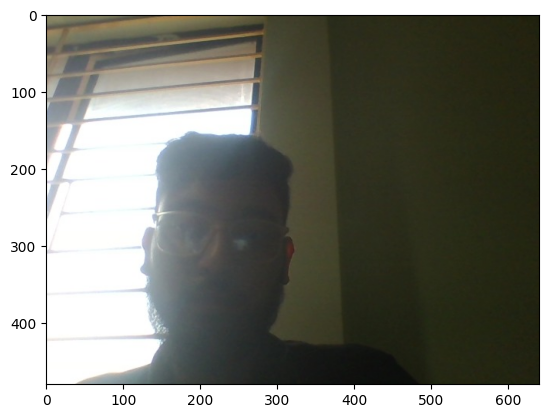

In [21]:
image_array=base64_to_numpy(image2)
image_array
plt.imshow(image_array)

In [22]:
image4="/9j/4AAQSkZJRgABAQEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wCEAAIDAwMEAwQFBQQGBgYGBggIBwcICA0JCgkKCQ0TDA4MDA4MExEUEQ8RFBEeGBUVGB4jHRwdIyolJSo1MjVFRVwBAgMDAwQDBAUFBAYGBgYGCAgHBwgIDQkKCQoJDRMMDgwMDgwTERQRDxEUER4YFRUYHiMdHB0jKiUlKjUyNUVFXP/CABEICx8QggMBIgACEQEDEQH/xAA5AAABBQEBAQEBAAAAAAAAAAADAgQFBgcBAAgJCgEAAgMBAQEBAQAAAAAAAAAAAgMBBAUABgcICf/aAAwDAQACEAMQAAAA+lV+7+nvxqjxxCSOG5MA6Qkcy645EtG8g1hqfFQLfJSWO4UalytQFsk6w9GVq90HISoimBG4HDglX4h5xSJUlXuBPueVJdbl4BdUjpTzqORBOi8BGULoSQfPM5SfKKOe8TpQhfo5JQLiVqGqQPwBIE6e9k0K54ZT3wpjvEeieEAQTUjw4PvuJ6CeF7oPxCQYfgedLlbRRQ4U2VAuONu8TlbNQw5W2KDCebqiD9F4WOOgUBOegJBrI0LDD8briCdQkwN4Kj4i26pEywJIS9QklmS2WwF8ByQMlCDh2ViUgfKZmgnh2JgNzwSek3B8ElLbImHnWnhY+8x8EvENuEToYBhzpQFA1yRkoXSh4w9a7JeZHVZXxqmJdejkEt6FsMhepjRGmU7FekJT0ZzulORvJCSXFLLpYsIeDlVRRJ6QAhmVd7xmuYfpaoEHvG42S8E15HPFxZOCQJGFiJITHvC581R0u/NEQTwTUAy9A3FJvuM1yciuKV0Si4xQzJuYYnROOYMo9MqhlTMkJmIOfejRQUomMUPSHopUnIoZJjpLsYkSkzQhoKcJBrXM+uFX0y6o33FJLj1kUkpl7ukDxhgmUPDHCZNxDEApUTNPE8SwUBPVsuKY/S0TBvksEwT7zBRC9G1QRmEkAMd+argnCmfBl8RgqCkSRxOKQ6yUBOfNFqaZAuc4yQciT+b8gnHgJiXXgciXHgp43Kmvl84U14Bu+NvcxxxsiJdDbj4nfGiYl2ltzpOEYOhylqjod8a+7namKxJ2hr6Cc8Zp43nmihJ1wHoMohBICJAAhccadmXimBI52tp0ZekZEg5EjEom7W25BOFM/TDlbNUc56zV3PPNuTx0DTyyeBxoOvNOkL3rT3Ldea+kS8CgwOgCZhzxt4VmGNBCXggN50huKQejAPucCAiQd+Z8kXiWiYF4hoOecjajMXSGg2A9Q1REOkMxkh0Ngnof9jVHMj6MJEPkMfNF2hkglP1RneiUXE+6ZPjAcjJqiXE15QsSZkShItzIOVMRxEp2NUQvBN+8TpIBjLkQW3S6Sz90Pyx5O56piToc+bD7pFTJUg+XHkgpNcYSIklMRyMsuHOXTbqEcCUt2HIPTZYQo9NNmAZmRQwT3SKo3sdMOoU3RNkherOdcVwsxNBihRM0uB93SvYDkrniV4MjPNoJiQ2wtNedNj7W3PDYTVtUhbjVJUBcJGhTSourynyNc7F2urSdmLXVCU8evveiX7E+npfsUmClhxiYKSVFpiZQcaKZlORoeKTBFMomcLXjTNhVWUzFlBXUd0+2gGcjZe1wfTZl1QZhbWFZbuCzdpyiVc11rq2WXtbK9FjPXOkM+OE9ITBoQLqtiXUkkq5jqLE+uw6gewie5XkTFgFBIErE1h4qGSUVEs5mYjWDCTcpiOCU0uIVK3vo0fFKEjlxL40d7pkPM/ER+K56vyHvd9PdTz0yryFd3BGD0dCpXSLqgizyDjE+qR4Gq6Aoy4QMQGdw16DXKgEU7qhKB/FiGUk4nkqNxHWIIIZDhSEpDiJQgGLW3XBL6JES5QHsS44L0wdTRZc8GBUgRbcpSriPCCk9SImU35JPvMyCbxIPTzhIlcPPJ7PIT1MF3o1Lb7qfEPRK8UKTwayIrwRYXvOkPvDL3e6j0STguibkaEwTlbfvS56HyyOtuQTMQaoMvEeiXCUJAic5woJ5HiEnOc6FdF4oX7wjAvEpYoowmlXUJSYEK34cPSsyxLk8eYofEaFGTdBwD73g4JSOI6SIErpX4PRYVSFiw3ReU1RW5QY6UBS3u+suixYggJJ+NOGp3xkmRdJa8LniQd4XHfI6Vc6iSWtKZAxW7iJMhKeI4Oo6FcH2ZeJB1azFCvpENwPuCTzaYdlZmiHCkl4ECdtoMCFj7g94Hp6knQcn3vFPU990k6gnSVSSxxCt1hDjwexxuA5xe4rwchBBx3kGTJ8530T3i0gxK0eg+nCoZdGZGA3q2hgJwsSig/hq6XCm5Rk5m5BY48BUcdYPdzjglixfOcAi+F1Z96nsHxPR8z3U8hSx+QReSoXEZTc0EsglwRuoJBdWhQ8TqVwShrQpyUdTB+TxMETiPcROJ9HK5zkz7yedKuCJBG4PqJ8jg5ctHBdJkj5HESjkcsSkQSArRI+6n0wvyPDJEo8RKTzonwwFLcbw+gzoVimQhOAk8SrrB51Sony+ES3q+Eg1EGWJV7nujvvcmOK8qeT5Su5Pu8jvJVzu4hXGB7vuMHvFclaPe4Qc97nD4feyPE9RA8R1JjwZBwCU9G0OI6hg9R5Hd1HU8HR9Ty+IWGZ8NaTgQyhkeo8iRS3OEq4hGF0JUNXcr3OH3ecQ0ejIIk9570wpQyRPhLQQLIEhLckCQluSiP0ICVt0HK1ccJeFTxI4rkS3A7FMA84H0cKM3SvvlxIhufSAurV0J8tXF4iOxBEKREKKEpQ5M0UEvVNHAk4M2PMkGoID4KQlDhTP09KGhyxEgSOTHSriPcDJfNljL1utqQ9SgZw4YJjCBy2adIXR2znucnbqIXKmSZXIFhnfBLzNenFhLuI9SWvzxjxMzTxm8SZFNV8RyhP3KSpPd33uCXgrEJKR708NopkXcA3AUSfWaplQkN+l4WIF3HapLPIH5qULbDG4DiCs1kX1xIeJxcScjURrP2NOwJEkP0VzkVHM2RIt45kapZEf0hnHlZkpiSGORNTUZoEHLixsZ7rdIy7rFw3Eg+J0pV1HOhaOc7jnau+4p1OeEHi+g2Cep9V5RahImSiV6Z74aonqhKmOqQoR8jpJluN0jiAtYgcP3lCYld4E+6hCnuTx5Ra4QhC2nIHsNWlKBInhp4C8RwwV4ayBKhoGS84OJ8TyClXBcHiLb8LjFarYDpIvRxlD7IKK2SvnCmhYgnRp7lqCWHkW34POOgWUd6MhCrglj3E+9w8UhHEcrRUz3vUDyVK4LEmCpsGTxS+EUagPyep6eqR0SUriekiwkFnVo4BuFtFiT5LU0SVbY0F1Y+DKvK4ULT1PQr3Pd3vJ4yFeQgg71KWJX4fJSvo/Hyjt/TLs7BwS3xGRwg/Rj5xg95HeCoMwTwlxJFAULHBWZoYRSfdHPcGtxys1pa5G2TBnAkZ9zwgSkygcID+B0hc8F2Be9br7j94rmJIlXT1w1X0OfCKsyiUkSb8OAu4cHeh1wHoYdHUQKwdV3COjvQ4O1LDHoueGQs3jWRCgg+n3fLh3PK8PJUrswhXVQSjBIJdUlQdznOiPlIRxFIPon1JURw0q90+X5Xd1BVQbdBeASFpXBecBVBlKnoMIUSu5woHZ5wVuWOOZqQSMpKx73ULjidQoTJxKQYviPRK1jSMr8j0GpPexwvdS2eoUmJEYaogix9FpiCV3HWFS+MoK+Mnk8ExoUOYT7iRaryfQS/I8Pd8lMcpKPHyuD7BK8hXEtCUonqUpYS+cSs18Sni8joujqUe7u9T3p7z3u7yU84l9TwC77nulSeohvUp5M+T70Dzve9PCIcCfFeUt/ScUBcKkkj1K+dyFd9w8X0nEhRe8QUnT0AScUijqvSIukSxfOKQQpQvhLHwiZFHFDkeJ9xncT5HL8jqIDg1haPE+GxfucRwr4n3R0aedHkJ50c8nxCka+EAhlbyKU8Sa0gIDlKUjkwpCPM7vR8ZC/c9Kue5zhV7wWcfw1cC1iXMGctXErOdqvgWPyohJUK7nBWZO4nO+nk+VzuEAie4Z25ok/UrnlKF6IJzyJ7pAdHiLB7uN4fY4iwrgDmAToOcBSJw4aOFEQHETABk8UBSZtwLM3N0r4svAt22UJrIBEw5bt20CcbEZLdtAoMFEE56XRA94yEZlmCgUAgK/YO5U/mq/IDEySOfqKRmoybpk4I0XDHhGvRJ2sSoI/BdgSoQ14ziarkzhbwxLfs4bjAkGI2klJGiWremI4Hh5x5JA47gK+5s3Jx0NQyXCGMdqPK3ihR4mVEeyMJ6Ni27Fyw4Ls15ZsxYM6ULAuoXJdYuSkjTjKelZOvuuGwOKzyOl4kQ+PrfqCkKFAmEDGIpMlv3oMRmXhOPy+5b9m94HBgJgj+Z+klj531HkleTxjFpUju8EvBjyhq7ldASILwfu5fE9k+J8qD55KwlIyJLhgdeAhK8ZbW6S8ByB9Sph0j4Dy8GnmmSLnSXwB8p35qYR70fT5XFeYtID8HhIIiTUUHe5Sk9IHPE8jipT0O8hJuEXuD4niW6olygRRjqgdISqbKiT9B2BOPiOk4k8li+h9POSNliJvD4LF9R4uIjiR4xA9guc6hZrVzpEhSeQ0nUKV3e85xL8MgkRbU8SbougZ0jJxl6H3ETyfDBOhXI98JZirnEcPEFS0Rkb8lJuiS2HRGJZWcjdRA5IzXIP/NiQxSxI4lD5zo8oSpEnRdBp1JXBKUhMSRPFgxLc4FuSErTiMRjzhejEmJV3vJX1HlHClpXCyEQqDd9Afi97pOIfOKgVFF0DccIIG9QPs9xPvdyupXB9T1cFxBOdyeqVHLVzsF3quQSQFDHIGUckhSSiSuI5xF8JMQczVYy5TzsEpSeRyx87EJJ70cVSFgXveTJc4rwj5Xu8S/JXJpQUIFzyVjKl8UJl9wkFzvk8RlN19LogFxBnDY0E4UEoStSVDPloJ0+57sEjiuRKFDSJE6PwkRQeCRkp8fJ533dz3udy/IVBF6NfSvoexxyNSCTpIUxJkITB9SnvF33OBKvI8Pd4nh8rieT3ec7B955Ml5HR8fvdSIdTzwEofuA7g/I6Oo6nuJ1CunvvJ6fCXzjT3nelXeKCeIV6GJGT0yPilxyVdX3JOgos90q1WxrUZXAWv0ijhEkv3fKmemCaGK8TwGPy/EKBuEzzbxeSkHV+aIEnGSQ8IiYSgqegYnAiEKTBJYklSUDGRMrEMqCEIijekfucgeIUme4MguLyVolfk95K+eT4uQEoeETY7chSPyST3w/StA/JaJehUUF6pMhzqFGHB9GSyeQsoIoZInq2vZh2Vp7hkSMT8Dno1AK1CQUOVtPdLvwe9wxLFMqUPvC68BUSVQ+TDlCUdyvI6HL5xM8VQVzLniewJzNzQJujXxvijWEdCdv0DKFRcpmZvw9ONzPEcgeRwRma9HWo2fQZolvIrQERA4S3USnT+NP0P0MC8TlY+xzlIyFBzhdECjB7wvpeImE9Pzdclar3agvINKDcWRTtFAR0tkRzpsT0yNIWUyevmjWj4gCFDcBWDe6EJjA7oD4B64S5ghDMjobkdtyLwRR3C8Zsm7B6xFHEEiNiDlPCR6Th31iMknY+RMHdMlmEouM9xFAFEy9cxzoYddbG43HEJkuIQPhIyIGZbtjtZX0onEh4gnPF4ySiRCrNAjS5JBB8493R3eh9Z5LhQ9mVkD7pOP3OjnCciBIKmJ8USwgiFhKVqHwY7znJb1bdfB4g1waV8JzUjWOJQhwjuE2ftgcBauKsJ4VAN8MvRgQjgIlcEVnF6JfQTiVQnnuig+JJyGDUnh8vg1csy2ygBwkXIgiE84+kB3pN1HRgqwqkV8ESZ5xPRYZAvCC/I5JLSnvF0rdYy54FMc74Dsg4QDs8ZQPKaXo/A03kek1D4SWpMDocVY/RxfIXxqUNYwtQ18ZfD8ozdH4GFSnnAXnU8S/eHPLUPsrVznmRxBORABrSxIFpU1RvN1NUUovSLsrNYk9SFJcTnucSeg9EFIzKLXi2BOh35r6edEZFWw/RiA1AOHpAJ0LoAr3ZJfRmCeeKSIbFTyecmZORl0RusSMpKYLyej6OlCQWOkhUJkH0nF4ZecYvcKJcMPkT4gy9K+o73HWJQkpHuLlAygZyglVHNOOhwYedH3dUjvd0oSDxiBUBF4lPEXiO8KiBJJEWMgmrikj3UqRPdKnnH1XCzyElSMg8XgzzvOrJZBKAjp4juV1HJlyRquJdGZG4npmZwk62yohz1vzpd8brWXfJH0rGjxM54YwBz1ouDc8D2JNwSYk6UJjjKB2ec9B3iOkfBIywK6HHgkF/U+RIk4jsErnOcXee4JcUjhcviO8KuI7BKT5Mn5HhwPfI9MkQFQkpCUqLouo6VKF6CMsPuIyOp4vD77i71K+JXOe6e+70CQpSgYPxu9wy9XxpItYNUXpatgSlriRpcrmWPH3e5h58KRbkX0x8vyuhPe+gueI4g2ypx7Ut1AVoi31okMkxsUwDcJsJBxwOVhSUfAETkcg3GdLIBw3uW1C6CYNwuhMSBLoZQ3S45MNUuEdDcThMwJJeksKFIKENyB6BAKMoHzqerCSVuxaE+82PKT2QKUReHg1BIej8gwWUJCg/FemA+UkYV5HiF06YvOkyxEUfkFT3c75XQVQCiXAnEXA8rhpIpJo7ylrEwDcAjk+ImQUknZkZ1L6EE50gOtJoX03HMlwoVwLhuVMQ2SYfcAKmzFu+tVDz95EEjnzJLLuS2Two83K1YpQuDlZFtlSL/wA19AuTMCd0uhnzheFi3MhNO4l9Eu5AT0TOYLhT38rFyIFIuI8i2PBtzKlxwQ1kRkBMhJkZdiRRTuMIhN0+eogmoi4zRYW8dzHyPAV428uHjiHXHPBsxGckBkKe7HOIE4MGMBMPI3wjrlSEsQoXG7AL1SJhBmx5Hy0uIIYCNphPUrnjuQliTrGvuWLwekgec7kpMjpbgdikReJ0hUtJokrhu7HjuRuIkiERkE/9Fe6VDVz1viu9RyJXxPiJfld6EdU26S+RyOL0Sjnvhqnl854IR7vFkoaxSJO873LSjpPJ4ZAJPloKOoII+Sk40MHwiBYNJUCxCSJEkDImC4vnZlaCCJPuEHxKGtINSlfIkQ18lZVA4Bm95PQtPk93kET09I370PVs3XR7i/cAedBLFoSgROkKYY9E0KPHW04JOlNVzJlNvTLnwuRB/D8Em4nsGXyRi4pGphMvB9gydGqSKsfly46L3cVQFRJFA8JmIJQGbo1RK1DT0mTxPcXnE9C/e8Q9EsZBwRfGoCDhYKVI61BvJXK19F3udebII3SQjgXCUo6OkTwWE8nxSVHkyJVNVgxw4ZGS0qQKElh73pF1S4PneriSqF0YOn3eISiChh+gVHOuN+iRvCVPKU3KJFUHotOoXjWZYVASvIXDPIX7j51HOhysHYk6g9Ei951ch91EwZHvCS0dHxjQVBc34RM91SOjJlI7BL9xXT7y/R3le9MkILwkcflR3Oe6Ur5zkQVQliS+pTxKGrg97nPRxFB6uDcT6DVxKeIqgK7nK26uh4RoQTecbcCXfWy55wpv0DcJDyCLwaZ5Y+DiFpB3pd9beGTeCmecraFW1wkaYI62qphx0JAcpS1QSFJRMF8lECXg+lxvCWBKR1Iz5PklK+j9PL4n08oXh9ykJFHGGNMyvgvcZBp4Jd4hIEXyeQR+CVEr8P0SRQ+iZU87LVLSQe6ry1PQXy1uQVXRNCid7vF6cHIcKLXtBS/BBict3PCp8OVp6MWGw+VYq4LKxt50R542t0EJMiQ7Lxsii1YiALjehExkQsr1mLtsFr4kRxwO7lgQ5E0ACcoNIAug8LdJ0sAPCp6G6HCTS3E6QYgSfkrb8N6RbN3o+hmF2KYa+MI4CF03KBNXwuWwG8TIsOOuElkB+JoM/HGQ8Xwkx3iuyoLZ6DgbeWlodMApwZQS8HkHSUNiKRwFM2XzHxWzpLCI8NbOlAohIofOlfE85ae8WwCFApTHXArEvIVwxGpCJU4UBXc4WHsc79zxwQ7dcokVtCTDpBBxK1N/cKBHbFDdo6bECyAXAlSIc8pvxvwF8DxQRuoEglupvPEUz9ynpmTngKpKSF16PHK3zyCeR0zK1p4LLS5qsrE2aSr8kmzLSddkgKZctHCWraji4iT9BlgHLVoCYlHMaaCcMktTMYmJX11iSBkyARLHjO2aIl+zikkuSJDrBkoeJTMTUe3QZMo6UaTEQ1dsuSdLVnIv1RqiW/btenLwLVHS6KwcEqScszLNIjKPmqyG7kufFEx+V2SCgvZAaTdEhIImCAEgTHivc7uEQWIcP45yPSXmwIPkZxtMuvMvdE2sHPY+EVxPSLhQq6DkbGg+gUge4Ffu7xBcIl9EuV96Mos6oSFtccF01kU3KpauIS2wpaOh3SI8cK4tMNQrnYhHecBnO87wjQsosbIcIEg+LzuFwqO7nfC6SJR0S8FwkJCNwPpR7nYLivBHirCqYUlae7yFIgVOmiy6Q83VA+95Ri0SRIk28QYmhXQwxfhcmTqbqDj+B2DMtoaOcdaFiDrD0jd8Chbi+4nidebmAlKHwWGI3Ith/D4BkIDkgdQCwXTB8tzhTYvSXw+zHfeSULWPsSTwujxEJ6Qd55TA4JSYAYyoejxA9YJOi7wq4lPCVKATxCNU8LpbJcQ84z9xvvM0FL8rByJu0gIpiuo6B9KHoMMoZhZ4o3EMT3vulXVJCeJV3jbcIEe6oKT5yQBA4qgqiSebqhhli90nM36S3CwLhqu9RB+Qv0clSe9xShUJm4gkTxK0qJHeDZJvBOBoSTk8BJPdw/K53K7xIkRQ19JSCVHLT1Mcrwu9xlB5xGUhXT1Q+9ylo53EWL3crnPR3U9SHeUj3cTnPcxSE8XylhV3FI3L0HU3LxFUHnc4U3UPOVNeqNx4Ke4qRojioR7pXxPePyh97l+HzuMsPRc48Dq2FWBU88cCc1dHpBKA0j5xiiN3rJi/LF1yC9CuJInnB73PIAu+R6ZIlKYhSUoKPCSjj74fhNaPI6e+EiYLwfQIqgk41qRzpUofQ5XRrBhDNywwxEOEP4tfEXUuRnBqidMm0x8782umTbyda6oMyCjqRyzKahg6k5FL2ckuQztdkqRVWsRLCxhsIqkVdozQyaoixsNDKYv0uAJ09auM/TKNXRgDKTG1NXjbZEa+PGDdIfRYDdhsIbiONiRIccJbTyuGHBlTEASVMgHhUGAvF5IhEYRCIRxyLRDlJiy87DMBE5DAAbOQ9AW527FIAQBgkSxMDxW3TW783XwrAkHAcfPGrhR+ctz4SZh1xvyQMkfJ43W6umScR50tcpEmSdebEDnHA9nlcHw1mKBUCVA+wRyM19DlIVTyko5Kj8F2ZcmbGiHKgF4SKQrgO6ZOpF7zvY5ukjZgFAgfcgC2vATgl8PRrEwRo77gA3dMOlSRo4CNyI4m3ejJLgzYvKc+Qk4A2KjhWdoYZeOmDwGSk5AyoHOv4V8MyL2LfjM0UPa1hY0K4oYZQtWl+3kRlqdqXpciL4ThezKbAwTeSVIQXuiIeNUN5kyOcGCKKWJZqfePhqAzgSRy2/CwZGYmoKPDYCF87MK51McHyCzBnbd/EuHAnYnzrhRQzWcUSog+9y+9TxoTwUiZAPAZA8H09R1ET5PkzC1te9D87Aoy6YBDJrbJB0OfN/cFk4j3t/BdT7wl4iPdC1ANMe6Lh93yUqNfUcIeKT6VkUnwWlcQmTX0ZRhPUFIFoTzpWtqaWl8PvCVPvByOKTErQocH0gycxagrCEjJweH7qYnnvI7uCck6WHipEgK6rjErhIhv3noNaCJGRdImIStfeEPCI6U+96YSYSegqma+4/m3OhfQdE1oEPmF4Pvd73exASoTHKMzLElK37MuytDAZOpUDlrASD77yYgpAEW5Sk8FpuCSJuPAUEvFNSQTjwVLcTqO9xVA9MnU3J0LUlPSXw+xJPc7w88hUj3nEMHiVINXhqGQd9xBLKkfCWoahkKUe5PcUhMydbTw85UJXEVy36BncMTCbhQCARVjMtnSI8LTLCQWF8JQGRbdcOL4fYjgSp7gcIiRSRHe4im5IInReHjEak4nHQdiDlZKmXhGJeY48JcGvvPCSlI9HFWNUGTnULLyfdPu95xc9UP0EtPESXEKRPe8P0QRYydJiNydy0p9088hMQpQu9DkrVcyfoFTBeiXxE8LoSRKPRxPB9xF8BXcbiPdPueTHeUPowQrckSZbcvMJ4fh4nReGHCwKAidT3u8hXGcNXOCZOiUBd9zkT7nkzyjtFibkgnSbaVEIqzyRj3KLDsSxrf7imzFFCHza4lC5ZpmI3VMG4FES4QDkSfgfRBUi5PLSgXQtCPSxSUJGVoQiJWkfZkvE9Wxa0K6V+SrpV5Po7pBKBy3DZwpjl4klDYT0pVWG5HqlvbO/cBi3LVcFOvIl5n6Uido8qaCWb8Ex6Sjnq2yB27mleWofelfEp5fArWa2qHSHKZDeichvwwSSnnuMX0ffMriav0mmttp1po5jT0p6Iq7K0xl7Phe9XazwBfAKGiSpNTfixEPE850dQpM8Ea0MQgZidzJL0EwERRnAQlb8sICtpETYjdq+BKA0oERvIJUhbFeUk/SID9r3NCIQ1BetfNQ8SDhg58LkgbgvSJzsyxz0rRcMc+ZpGXnY/3DJdj1zzwrJUi7Wy70OPNl9B+g9AuOtlcRut+9Blt1xLpwyNHPDNXM8dYCwLl0yddDjw08KmK2JCoQU8ZhcRIcO25IPOAISQ9TwuGwftYhmhwOQGNwjpBwveDhUnJSeOhyEcJ2AoblWeJS75KAS5dEsDUmel40TQJBMPEn7XsxQjM2ArrSQNS3BfA+II5EYnUPgy4i1QRyhvHgch4oCYHgU9FgZFk/IDyCH4m2ayDbmQrKbi5W0YvmErYspePYDBRfEKW7j3QAL5USwK+dSLN8aRCRHeH5jHjoHS1EQRD3o/FBB8EBcGgcwtHEi1fhpHloTzu8PgI5XEinnPW3i4wDhAgIV6B95Xuiw9Ar3nz9JRqWS+j8cL973Dz3OyXh+Gvl+Wk4T3qp7xBLBwlDVMK6hYwpPPTCh95JdUH0G68kZw9EJQStQ1CXU89BLGvxkriuqIakKGe+H3h97nY7nl84kiOmObJc+7mqSqjgid+6W3DIg26u+6RmGjuJxPYHvPc5YwrREo6IcMIEdczbtj5WBAFtVXZFoyHVMfJfQX66hbvW+O8X3r2S3SvkoQpXOla2y1m4I3Uuy562Kt7gjbosP4agepYuwRUJJBJ91AGYjb3G+6zWthyNlDLzg+SRO8T0kWFUwZI/DKiBT0uuAUMESPrIUPoyAg/JJfUcCQF63UxKvC6QL8jsijhE9wRuOQwJxqBh0o8BOFtejL00cQSkDxzkGuzNFAxypkfiKoXVsN5HuNXueE1pH4ZWnyJj3kJkVdCkpP5tzuedAoCcdbc7nXgDg3pWJul8di4Ei9F4TMoXeM6mxBJx4axL3kp6Vc4PuKnnulfEe6eo4lfc5xE8UjdUc4W3XMGQLnSVHkdyiAVPGWDvcfwVDJ+t+yTnjf0c46BXSvg+dyvI93EI1J3F8NXT3o+rknReGXPW6h43h+4i9R3pWUauI6hKE1JJziQvhBIHi+6QpUgRT7iShSgqCHDlmQXyp4h5V1HqgqRa4DoW1iAByxTKkYyWfrfpCdbZPQ5439xHQDvCRTNPS642TMukC50F4JPSXgldPUeTxdT3gl4oiLIivGXYEtaBL3OeIVKQUGrdN3Va9LOWDzI9GdwFxTuuSNiIvnbm7Is/OV2KfXaJCtZC6QNVl51o6WwjkTlFlwcC61l1wSEktI0PSYjYnApPEmHRrE1Qm6gvrqSPxpKoS+EgU8YsQ++bV71HSATJ6OxVhGNhj7+dGJkeNrxIZVuxTQD3hohhyLCzXFz3DjnVkDhm50SSAyIiIDIJcmNBKlmIIVnSDKomygIK4OebkuGazQTVBrfcNbHjxJwBBx9DRrJNXIjm8g3s0AcTyzUKQLg1eIkoh3vfcXOp4wCCSkC8niYhZRd6HJGfemR8zX3OPN/FDtbVYybgu9xvCX0mSL3Q7K2UMyB2B4l67jjxD07FfQ/4BPAJk4aMkHhJ4XIhhmD+DwgcnjzQLniBkHRcREp8IpD4LscC164T0JLz0g74tcqjwvWZRw3Hk84lmsqtjmXbyiLCXqpUZameCjisxxUQ/ZnYTyXLEJhZFwLgDejatCmVZMm0j2KeoYEeV8ouj2zocE1K4IMIkvPgJToh1vhw+QwARsnHkqKYS0axceF0KYBx3yeadfe6GjkrqOauVkiVu0PBJRFeE28a+jiICCANI/LTBDQUA8NKh9PO8SXdShKyWkQe5SBk4VtHAZn3Pcjnax+4g8X7g57ni6ZR5Xufna0d5ErR708rnOTBPJTJ84UAcT3Ez3iIJM+T3i5WPyDjiVJCOkCspX0Ko7yvLYaV8J3c9wYysguCwvhkKVdF2OLz3BP3lIkV+GqOUlaY5SO+EkECoZUnvZhPFdHh996R8k3i5qE7flgbAwrDfvvMg1m5eOjgruU5DefkD5J9z+gqfgWl+A+uR+a6VRvGfSPm2Xmbx6/yOY6XKUwH3O/RFq8T9Vyj9dPkP9U/oHmsE+Ev2K/Hrz/yqX988bp+j/zO/wDI76bxTjwCLYvqUc9yoSkPKttxdl4tt0HOuD8BOPCIDFdH7mrWPqzUoSSYcjZUc56FcmZQFCZ+hV0OPC8IrTwRSTyEDJ/NlDLnjRfSdI+EtSfJjke6NqSC5xi1c8OecpB4eN4fJIq25oLnUeEuqD2IKpPBYYjXyXSRIxfFILYHjnXG/FMedZKhkgtgUCceT6ZUlPI5Q/Dnlj4kx90HoF4lv6HvOA8Em627HHMzP3PnDA/E74JQmbwUCbtTVXG8KzUMukh9BFSjk8RIljJPAUMrSj0j5PkcS+jSQOOg53HQD3c543V0H639JOutuRDrgvQTjrfnG48393H837BOOteRzvgedzngl9yyA7xF4370OVNVdDjoOoM6gc4nq2pRNz0HRY5K0XHO1A5xlUHvSbiUx3m5W890fEnBOi6IF6NKydGj1i+T8y8i1JgY+mD9adclwgCYhykSZJxxvyVl8BHQbgEdznjXvc5SFXSXwk9DlIfcRvC73LSlPcTyOcZSBKpshNxc3kenZR1giwOK8UejirWFyDTHG4p6bswjZ2sRw1RVuSRI8ybT9bQ62PCB6BPXkO+Fr5AlLeniBNrSjuJe1b0mRiWncdoCkCJ4CX1z+bc4HfmnJh6IXDDgSNrCPJ4htYnAo4XKQdMTJGqQWPiCSoPEurJbmDaqB8Qb64GrwDK4kmDIN42SbWK0Qh03t0RmbmiV+94T8k3VmA/irZxJBrcEZAxCGrhuQtGrpq9Ddt1s+vwXmrkkCFDa7pIOGs7bwzWNm8a2aLFJx3s1ToZmVTLQ46BJcjKWqSh7kK50Z8giu4XViiEqRzuIoC4g/Q9mTmbK7nfQ9KFqCmOccAQecdb96XxWa45+5iidM32IPC5ccdyYfga8KVsXLMo8MQ5E/mqeF8eNNMSKGYZh0JqOQecY8jpR1DnkZBLb0LckaFnnxgOYWJlKCNTGQbSXTJS0dJosSj6KeqZLyUD2Ik45k2OHQVNjWTwnESBi8a8Thzx7Es28i36UCMggQYbaR6AQiHyBdiVrAuJkn8U9AphuGMA+jWg+A1KzLhNHICBml36ebLdkiWy3XhkCy+7gKLziM5ZmGXIOs+JTTougSFjIO+SmC4Bw2k0DWiV8H0YdwKx9ARKGfd8PkQ4U39EuED5HGQLhSfrbswTwvT1kKMvuPmqCcXxoQpfc384RJo8IhB0ZhdyUGTxe93wmj3lRHBkHw9T3g9xaOkzq0K7uGR2ZV4ao5YicgkkAuTKFaIhfBL6CeQLmPODVMLWhXQtHudHPJ5E+XzsTzyU9BEicDw1+DwL6NcwGk2/IPOOwaInb/wDE/wBUZN9qYJ9M+k0RS+qbPh+g+a/lH9Yfzu+B/ZPmjSfOUfRa0HV22Br/ABh9PVqr/U/kn01nn1VkPkPfpcSf1Vd08H/RTti3PgtZ+MfvBvn0/wAifiL9rfk7S9TmFn1HN/uH5zalodw9p8Qd+GX1nihdA1rzIHjHfWXPQlC0UgDC1Sx+FpCNyQReiMmee8nm+LzncpQ1gZuA70uvA53OFNSRJFCWXdV4cD4ZRcaPcFxF6FQwTw1RK0I8zlcH4eUkaODvUpKC9b9njkaqCXHWyp5ahlku9H0ZV5KhZxQlQS3bJaWSHGRFsOtv0GHU3VxOnMeSJfLal41DVzuEEvJWISuFHvC7Em6BAy5627HOStFw16ZgcSkFxpeN7xooZd9ZqKXqmJFm5Wy90vusiRznwFTLhIOjxEj8XF4D0SXg+SBEpTy++GjpJ0HZ5x0KY51wPu5wporucqbL4i9CnjMkPuMvQ8iXC2yxlwRurocCGmJLxsjpeljjRzvrLg9IeYEWb4rFcPkOsTdLlbXwS/JHLiXnWnul6uP73Om6AyJeBQcuCNSjLjyDCwKiJEu+5yCWlIxlKgJal0ht4QdKbdB5/CJzep8mOSMiOFHueIFKQmOL4Hpg/ge7nHQd7iqCrpWoKua4Ko1TQeO4ztLVlhRxRalC+NrKXxQseuWDilpPFx60WH6G6lmYrMibD97FvK12UKyPWs9KtJcUzZyBpA9bTJH8W8U2Q6BVG8583ULCoQglm4ARC58ySa5DjThgZDZLkHSDjFkSkfCYY0Eo/WfCU+Q1QUOvM+srnQHja60cQ5XBpG+upuRBpaC4CxVOEaiV0ZPCQy+WJ8AZuJd4AQMcoZjJboDMZLcNWzVgvWrRuajMeM7VN0zait0HgmYWpkvM19zhTbhLch63sU0oUe9nIcBIdYxwuyHniriI4Em3mWanPo5v4y+5sB83nmgzpjm5BkjuqSQg6RHpgvUemFiUjuWQahlawKglrCqecGA46OrFwROsPej3QhZzsKQ8KBibyLpAOcJHDFcg9G1GUGQ1RKnPWay52SP9ISbqEMMTZotyS5l/CSgrcITzjcOQdGXstEuBmSNEORmVQ1N0qWosEMvCcXFdTEtycVPSK4xwAGGpvJC62AxR2SGkwjiHM8J04dC5mbw4NRhuIDi3ShIDV626YphKxZcFCEEBliVBFWlQn3gx9zgSOTxVB73G4McccYEQSg9Dx+6JU91HRxJQ9a9Hh+BIk4NECluQJQno+9yfdTEJKNZCPvEDPUp8XL8g0d7y/SFlM3L7v5uVPFdKlKTxcG48RtuOvCDHj8J83G4EPdT1fcLi0iaEE6PBSVMz4JRwXVcIXdR7vd1SUxJRqSUEQgkSpKedPeo7MeMlYsUniilKkqkSJ6ri5xY5hfEc4VJUEhKoSwhPugEFxj/E6OZEfOkj9t/Nf078A/cW8/Rce4zTTJeE75nYJCtrxfR3X8rv14+Y/iX6Hyy3bVUsH6F+eA9lv3ifp/z0P6Y0fWo5nS97uu/5QWlQuSs8D9FaB+ZP0NNb7GiqNK7HiJFh1V2xymXQQW/i74H/AG0+RfNex/P3RMRpn0L5pr3y/wDT/wAs1G7L9Mfld+iH6M/NOqFin/p/nLxYFre8QNYsL7gwYVaBqYfjfpE5U0ciRxJGMnSPx88SJQ8rqPCJTtFxzpHORKue7MA6REGhBU80fu+iUJ56TShQBkiUI4CIT4h94fukpWxQ43Reglkb8InKm/ol10XVtcdGUC51JYMRfdWfeK5Bd6nwsL1HhlydoTjedAoe6hXO4IjhkR+7zoTzvJgfOo7iKbLg3B2SgN+povuddbcknJGShJ0VkuCdcbK4nqma4534HI531pzjdoH6RJ5A4BwNPe4nBK7lD6nu8lPTgnRKiSpH7uX0Xi46g8DnCR86VpQKJMpqrmOitSxxlB7BEGMImRCAyLlbHvc8Uz9JvDR5xJ6VmpLXxGKlk9WxUfPesTAbrwOBL3gCQakd5IjQvxQk4+cbwjIy3ufNlxJki7xd4jkj5soJgtQ18hSweWbtTM0WVo76C70XpEqHBVNajKIgb8WNiOc8ro8QRO4ikd4lEC5FjjquU9TnmymKcEaEWx4RiZVh6ofVXXLiNdV7aeo5wu1NVptOFNSJfJOYx3TuyJ2Jqt6SfwrxL5N20e09JaSEU6NHLDasK1JQfeD5EGSPkwgPkuSvvVRzdKmzkF6PjF9EpDU+EoLkESx61D0IhgR0h4S3PmxOAqEBMHIgt2JdHZOCW8GlINYx0uyt0I5PhWKRjNii03EN1uMALbuIADU0nG0CxZ2o2bazhszbOQ/aNmrFugNG9qo4bBb2s98loqQdrjjmL0jJyaTD8h9NwQK2oMpC2IO6ZOpB0sB+4Yyj4Qp6ji8XnehDJ22mAt3IO4PvdmPGSsu6nwoAygFmD+447g8ct+7yVejvdQnpdmZrmHQu9HvFaL6CBIHjQhISTwCxzCUI4Suka9lJx8SQoAtM8rgkSDkQ18CnbJya3ryPdd0vJRUiAOXDeR4hlEUGujtZKI46JIxI3JVg5R0pTw26mpsM2btT522aj6JJzCuOXYWbVuJJaEC1PPILPLexxx6bUybraZbJ2QyL5hMSBeuAAyDF6Ok/RjttPNRmR0DIgkl3qBQSx8F0l4PncfrdUc4SHkF4XRSKwqFMK6HkSUHW/SQPQzCxeDA9QNEyRKfcPE8FwkTzvGlfOFKBmREISrxd3qOjBPN/GN76ZXvvlYVF4J+6tLSUhwkZGonAFIXIzY289GMRnJFrDG3D9kgoX0YaKWmO8PpOJHFp4k8WjhR33ZNXFAISrF6AL0SoP3fcmFlC54+IV6IUMwShSidmfIX2eGoiCgSC+lYkJbiksZXPkbz2R9RwvxZ+hXjf0p9kXqqPV05VzAui8y3kGgedOcgyc50TOqB5va0LFfl7PvmX0L6X+sPgT711Pq+zXDPprIr1tweX8b9Hg/iT7XyCpDaiYXhSLP6ZWX8WIfZ+f/vrSfxUhHY37O59+VNXYz9FMFpt18j9jz2953paPfX35V+osOf5r5K/Q/8APmX/AFD+Jf00kvl/6N+nfHZ8kY50MaSU0Wpz1AEi54EBluLxv2SdqZlEjqarky9GnocLAQeWQColzwKg5wMHJ54WOcTD4HfKnnO+hnhnEJN1KRLW/DomG4j8mG6DN+D3vC4zp8hZmULoNOtt4eOpJINXfLFquoX0FUFYNMoBVmfw+wfie8Bp53kT4oViTrrckETgezxQ89EIQrkx7ikSSBHb9PE8SQKOBfMN0HBl3xqsRcEYqZDtTMiyckae6HpGZOa58LvGfw0wLjwlQBFCWMq4n3cTnEzxEJTPK8hRcrwkDx+D6XK6nncTo+BxUh53FSHnMPxHJNydoaIc+AkY636IZ4PiClfhICXS2RO50VkXieKZ9g3q49Yc9WyJJPjsTrsSCgkr2ulbkEnSRJGfJSYxV33YNPSg6V+HyYJ4Seg6kSIWI5pZmQsiivbKE0oVyjImD86Z2KS1A7IHIzdiw50+rXxN34yGMQ9avpB55DVmI1IXOuD8BFU1J0y3o/tS8biBGlwtsXnHM1JXfIlj3NbSKtChcXo1IcXwlIsqULwk8kImQrXJMo3Gdr8ceMp7p7Hmp6Eqdg4q2nSm6gYVuUcc3R0TkKTxHR1PENQfoVRCALQ1XUEG2O86I0dblFYqshmaXstQhBah35nzukVsVV3vBg5xFEJLEmOyUQPUs/DLsIOcLNsdlfzTOWhQcQBGymgaKZtR1l5g+sRDYbax2PWbUoD5o1K2yQuWpuIVrOMkY31CEZqalwsBzQ862ctQ4WExJWpPTWcwSyJloX3FWD3A5EAkx5JAwREpRI9H1HSkBRxI1q8Qo8vgwH3enCue5IuXTR2POWLhtxJUDvcTiSxyCGLxcIQi2tUumsEFqZuShi6NqfCUMlpGcxJaceIOu1Q6BINlETMNUu/cDRD3hiMynUqVICk+Jw685HkvAGEFmM/BzKYQ8Bh3LNgB2IEAGIm0QJ+mQ4y9zFCjglz5mNZgZ62XIvRhWEraLZkKOhcHBDh6IuO+XHDdI4UyU1XXIRYo9kgjQ1KEWDbOGYME26JgqWAc84QHo8QfEQa1NCkt1wSYIngjElpEnpUgIyEqQIGDdEroUHyOJIlAlaxDDMH6LpFzvFRKSe5BF4lRElBBxyUk8HJQ4X3MvOPEN86bn0j477yVwSU9GLOqb1RKLiTG142zsa8fmcj2OjorDy7lTHIiQ3sAgSpuVxgeoGWgH4S4Dd8KOD542kkeImRF4wulHi8EgccCkU9UgZ8Tye4pALmFe97uSVCzBZBJ4z9R6Z75LAay2fxdjnjH/otjPyv9W5v175Dyb9R/hXyvuM80+lQtDS+yPpr8tkT5/wDc+8/jb9r3/LfZavlaLt+R+r2vwXvLrey4UeB7J+WawHOPn/6F+xLj+bNMteb/AGqe/jG9y739AdU/JE/yf9O/dfwJp2N1b1unbDYs/wCtfPeebdmfufktSk3kvdo0fWMu1Ohv17WvnD688h7fIbWiWxPSWD5r+k4i15z89ntqZ/pb8Xz/ANcfD+iel89+hLyGe/TPg0mSPLxvix5Fud8a9W5wlKRa8XHk43ZW3RMxgriXHQcmXfgliOqEsS77nOIye+6ClakTJyNjCfU8RE9SrpQMZPdyAnDJCEYJgEZxgaSBKDFBIkXc97ipcLaGh73qTAXFLVBhUTwM71fgYtSF9JU98su852C4nvRn3Up4leTyOUPiO5ZW/e4vk+6fAMOeGgouLnuC6C9H2FrR7kkkgecBugVJuVtejzwrJc8860JHO/N1dzsjQvS54jnGbyOh3FpRHKQpBT3gxlB+B4MH8LvS6U2JPET1M8NJBxyfcGDXCm5OIim/eW4G25xFQIfC4EkcwQaRQw/W/YJ2tmQOecB3iddaE6Xh2LkWvHDJwmy9U1It50DTBPCNpFLuv5qazPQVVjd2InXATkq6jQBXKu26Ub0a7NKx2SOs3nPaOZNnIYfpowr1HRDwNqgb2XBViz03e8oBSXGlipMMy3uZJlMUtXhPLqaKYiY9Iwkfam9ipVW9gg9DHQoXbVY3h8EnfQ9XJOe4JdIPgMcdGRTnRWZUXZB1GvK2iZHC1bwlG8BA658tiHQiptSshDSmZrvity0dUxALWx+ZkWtZemYu1WCoUMDbhK3dVWJKW1lCSNynXWnu5wpt4wcI4MoWgIXVnDdA301C8mxVCF0GzTaDcCs1xpW3JZ0tkSLpDXxrdqZqBjhDUMw+VG9HnrRHphRWqYlw3Q3ghtjM2obsHTF1QYuhfVS0IzegTdTVqOteIdVSLiLFFfUesV++Qo0uDhMaHJwOGVyeWqR8tJZhRxliTEGXo6I4pES0+7loImO4kieJHFk4Gonfp5ol4jpbrMnoBwo54fD86OOBoIT9EpZC930mVwIgGvveDLtYjcQxOOCTNnKCEo1L8DExg3grFRJhGZUSkyeQ0C+4UR6HqCFuY5o5rx6ogZrfdIBSLd7HODDKPLeN5AekJIMitzVJ42GJjDtpBKkHIQvAt4lfAriRLdhKUJGyiJHsQbgmDxzqV9TwZH7rY3Qpy3MS5VYuCSWvA85wdh0ZfdjVCT/rDsMNHkbTyAkCUI8kUQsrTgk4b+EUG63NKz+QvpUjnINKVjgBDWgoSgXogqmfhk40DIuh6ieHzqe5SkkglF8QJHw5BJp4rbi8JQyFTgPRIvOcHve96Z0JFUwff+dfS8P81QHi/pu3t8qH4b7Bp/zFbZzI26ZKfQlj8f8Ac8A3133Jv7d8faB8/anzW6a5mv2f6m9mPtJxn7v+JJ9RRfQPmieeQ5SOqMQtOmbkSEu23R4fVc0flijkjIgY8PnIjpAdiHC26AkyENzXILjRQiY9Va/VDRm+LZ5jz9I5riW14ntvnD6T1jVcn75oWgwTOj49qCFrz/IUa2YP8nY29944n8cwuTevmYueZv0FN5yRuKtONlaTqXnavmCYba+s335+WK3kfSHy9X7UrTDo2M/VnlPuMnNywPiX6ZnY7u/Ym7h/CT1zPyvL/pTEvW/O8X2vDtB9N4+cbPNW8r9HqY7hm9Blwt8Rb/LfQ2slKnx9D5P+cfp7CP0x+IIS2Y1sP0H5Pb/tX8vPs/2fiPox3Gvvb/JTqAYGEUFQPX4o12Oe52XFOIqWqKInT3yfdJSI5HGU3X3G6JXMNwJegiglGemaOFz1QORJeD7ArIPnCnixcSQq6QtUGQRJWninKSsYWPIV4CGYZ1scmamBzowFg9XO9A+893jUpHFy4U2P3E8nkGXheKYjiuyQkGTywIcAnk8Ijo8pHe7vOc5nu890ibuRcsHOiIDdAviWkax7vuKmU94PicLbKgHRWxukq0qk1Faq4HRGRI50RkQedcb+g3KEcgki6hkJT4IwVTRTeeEZeX0mWMXPPEASPLQFA8583T0uxBbzzjzJAk88yWQu+AT3FQNXT3qSwXiiVzHHR8jicEqecvI10tr9xHlW58tmRT3fkO12hWSCsNLTvFmg7H4z6MhtI+rWq/YFy0xFVm+w5DlCLtL7nmoF1Is8nf4dqoGuutlDJGrgRDD02/wWr5/OphLvd80wIZr3PDwbmIkEMed0g8h5Fdh4pp5FpUO/jrWfEoIHW8+tQyzBFe4iwtCvQRfJ6t/SiMLCK8araG5bqh74zVxn7LkwCVrLpaT17Q1EWmwR0zc1Ljk7clPSORqdNsxkdQ0ryPMD3/G6lMS0K1fW8Lg3VF8QlyyeGh1Y6W3iU4604fFChuysZAfNQVI+MUofBOqr4L1lBR94ahiMJqQpcIYkKCimBI6Ji0oUHgUpukhcjCLpKETboO2Q2kUsjsmp4HwbFPzU4GJasn7B1Nq2etXVQdIOxV77inV+lS4lZCJOQrMk0qUvpO7iuG4Or4bj8VJuHiSd4mfScmFK76I4I3ukRFKmBpcogm/HSJ5shz2QaedcIGfT8HmyTjmR88mIIZs4FhVo6s1kE66VF8SC51XhY1A4aTw26mZ1yg4F1VfQrZWOofZHpVlgA8feIWBy96PdWs1N3InHQlxx3BeL5Ywt3HG4bEWCdLOaj1MoYlsXzFGXzkE14oPERfkjymim5CJodoUAMHrFyblm4iCGC46RcIiC8tCOiQGHosUjoBIwTAggmGoh64b96VeGnpIArfuCFIOFXUqmOqWSZGdT7oZecMenwm7YeeIaBiXIBBmCICGeIoJukphOAkCXI+Jv4hIMZTKCUFQ8AxcdoW5m3ftuhpwvi5vx0iRGUZo73h+gfhfSIrWvhf66y2n7HhwZe56v+bGuhY+gtCxH2ZvafScNmbWLbafDbe29KYbVav6L5ttv2f8ACk9le73PN4+HbkfcNi+J/wBIdX0V2+Kvr/8ALlnwT6yl/iXRPpPmfpYkc8+r/BfBoeSV/NfRTH43xjzfp/0eifz7ZY3qf0ud/mdcHu/QMfztstmpYRfNeHj5v7XffFFUyPY/V9dwLO8u59kUf5dsFPd2qb+Q/q3F+gQFBrmgLu0e1aJgrV6r9h/mheJp/d8F8z4vS8/934xF1AiqQsr3EPolJjNHryrsnnrK/mukdZDntDqFusCnVGBodkuZlUy+8Z46dF1XFNEFxv0F/Oj75+b/AHzO7lZJn5t9pmNBo9d8P9EuLPpLOc3+Z9Rzf3ny2K0M+8Wdj5z19jG+N9S8oE/ZrFLPV2mr6eNsk5kt88T9ExmK1axe5+XfmNK/SfzB+gvx/L3fMp/0Hlv0JvXzd9EfX/iMgUBLPnFmalhrnrbqXOvCMixw4+rsKWLwMV0KJJyRoXgcFaFhh1NTQRFBVHGW3TBOVtVxxeITEkUDgQ48L0QXzbhSvg0cKwJTMHU36D3HB+W/vPJHiGbGWZStzLtOVNji8igLEzdAsWF9xXF0glLYVXOcZ+iXXny+d5yEE508XxfSIbhEg2E7blXD5YD7ywcmDh4Ie8hXJ5Pu8GekCuO6pPeYviF8fOHREJKHxJdeQiJN5rwudKae4X3WCu5wVmgpkVRhQJ30HBkifILudSqeR1PlTzokFzrzDpA66190uUAR3GGBIwsQxjzgjQhG8U16LDLb96HZ2LrucLD7pMlPuP3eJ6CGbkjnhWhIJ2Vg5U+RtMLd8X1pLKOV8v7mZeMD4XoOgS2aiTkYJ4l0tGkDEsZRoZ9ZETItmRGectbCOCbwtmjYxwDdtewxDJpapFJAC0siWbNRPqshLY6eFIy9bm02ZUzZebt+EFDa7uMMN1aJHMxt7MAtPnVnC2hUuceQpbu+6cXhORSHqOAqLRfJKm31yJ1U0COuOaOh4xe07wul6DRHEZLnBBlp6PXKS1bxC+XWtjKlcGnnASK23RtQPiQWKhkCQxS/BRaqFSJBoKkYyUVHOMV7qRsA4xiIFBQC1Uc9b8NTjjRDUPEtesS483UaHAe+MANnLewgAl+bWapdNzrhCUTUobLC1AmywMUNutsxPEeCYeQngkJq6CaWrZ2KxRajdIbWblWU18LxxEdL4sz1wgkd0iFSJFJKXEIks9wiS8Pe+6Jj4TpSPyld3l+III6VXAPx0C5ug4SWLxOTyUk5K23i96Wo3QO5uFyLloWnncUgXAM64QtdhyQflucKEY5AwkGJV2DVyI64En8xIeuFGkR+uu5JSIgUKSsh77vCjq0OOUIvTQK3CD8fWxW/cFTZwK3sq3moJPHYxZHoK1OEISEQ94XTF3xnyCO3U37mzfgTExmDw1yDho/GevPPINkzdIFjZLxcw3cFOJxykv47nHZ4dCJlG5LimbyNYBgpHHOBo5ECB4My4KzXIuER6V9Klhj9L1oBt3F43L0+EZMcMBBdKVcJMEKMyzKsBBd4Z0dzcvkjJ+gKDHBmhBIo2yOJ0hoLoc8bJ4XiGnplamY+h95r7ownK7tmvw79T6L88bB85bPjqB9IVRGle2/RcO3nyfscutWXBfQuOt0i25m98+tWlx9P4A9vitByvUQX2H82fq4n658PUC//AAU/8r/sT8gfn9Xb+b99/TH4vbD3t9u7BZP6X4vP58c9m/J4/wDRmSV9yCsse+sHJVCxQA06Pd620ZF9qVLkatzX8YtU1zLJQtbxwK9A0rJLI+zYfoL5Q+wMnfyywaFF14q+QfRGJWMeAtudRDr/ANqYbr1dzOmYIk/zPkCT1Kra1Jl6yvBiDu+aSAPJgv0HjxpuVovQl2Pnm13bLbtQWU33MEHD2xMl2nfvvH5x+o/ln6PvEQ1n/in6HtGO7ziTMa0VWhOvSeWjJaraDqZVN+2Pg/e8/SeRukZP5T3M9qnzRduVM4V9L8hNdvNb0jz3tc2vEm8oVvlnFvrf5P8Av35h+d12bJ/uv5c+1vpj80v0K+pfLbmVg99X8uUUKAaszXq2vSx5a7nrhiRdl15osLDpA1wfDi93F6PwMOoCuM6m3RA/m6hMpBoiT8CnoMkfOkyED6HIkBmToAghJ0aYlx0HEseeD0GFW3Ws3Kmqwa5K3ULDEF4HLUFYyQoFi5wtr0XvPD6DTGalEz9QtRrIAwWCKEpV1aecX3ee4a0NnLR9QYTNn1eDUMw5zqJlHPJEe+4iD6rnOhaweE3PgqgylbdjnvWrmO8MiSAA3IigSldIRdPweFxz3jaokBFAnTZIk7SJUAZXFLcgLzgOZDdhmG4SoJI0rAfLChPJInoelafd7vLEtZrWJPc463J0uHDNxMO1NyRxfCX3dIMvF4gTdClo9JkUPkTYtCym94PsrzI1aX8r7mwmgXNLVkURqoiZPEHr2JVEWKJkVRArFSXbRqGqlAsmrV+q8lVtrzT0EKjWwJwcb4g6w82vZjwbLrazpLdZKO8jpZVl86j/AFLXft2LU0SyI8rUkEjhq73pSAZCcF3CjUDHThmWtcejGpD1dQsGOHDd3W0CnG8paSngTUNJ4obilpj4TwOEZKlmVXXFS6lwhdW87KzcV7JOjKtwWT1i1IRebPqrAlu+qpIEPruUB49JetEnWc+bKmHSWy+7ouifWQDgLtMvgIbXcCSI0GGLzEHSgTFOVMesS/6xJynA0Dar3h+ckgCDOqyG9TYpRzSQYWazYDoNimzC5alLYBQErw/Blax+UxIQuEmhsh2EhEVHZWfol9LgoCTBTBXPHWNZcQ4HAyQyDdCe990kUgvRzpV9LVTgfCg3OQB+K5Bp4LkT5HucCej7Md8n093ivdwUrTIAA5D0C4VPd7vOiZFtui16eMciciRgeOVHuGxpaoKM1o4pRqIriuEqkLge8EmYItB3CopOCA1LOICKV1PNTLXxCbvBzzB6N0ATEjCP1G6C1JHMGj+ObwvIWQeQsXQIZgkJWqBSKQrD0pMA0w8k2M/0HlAySbTDkkuGw4ZlpMNXblUdCrl4YhM2ZtiXLNo9MrQzMFveRznR1sVmEjbiBEuhNVdBfd6En6n3EIROTIXDVZSVIERyg+FBlM06POStCBLs7X0MeIbCWx3xnzpcqa+mH3mYYNyBqOVnQ1DIyaWRhJ1wA5lwMCOFfmHpCFobSm/Bv1bWEarsOvY+WI/6UuuH6nKUapC4mz81w25Zf7b5HH2yUq1Teq7jSYFkVdzZYAlfb8lgfyk/5nY6/B1f03lO0m5wlq3AWA84WrqFPpm50GV+ct9ECjd8P3SgGD+s6rJWOwmA2nESrUK3AfEGQ3bK7R2lsVnx/ax6y5Hs3yqGTC6FQtAuXMy++Pln6OyPW6Oms3Dz9KmUCw4jsYGeMJTH7t/7OiLldsXU+QddyD6HtRidR+gvlhlXaJ6vyTgx2/57MKsfSXxr9QZOqtaZKnXy50FQtizXlUTH9o+fYfaNDpn04naJr+cucHc+nnuMar8f/SO6fGWq5dROLjY6N+k/PJqcdT2b6GN3DKvsr539hyiG+hM78zv4x9AYpp9vFaYjreP3c3ZfoP5o03zXp7SXAJ/NPQfjPfcI+i/Kmfzd9b1z6D4v5A+ma5ZP0L+W/rdy2L9b/Lq/cREqT7imm6hAOdGaOE2TKGpVk3ReE3CgeDnXW6+cbwVCRUoFxOkDKM8WIfG64HwibgkjJEiR0OEh8XGDzhStCG4w6SBYk5U1KlrnrRYMckZOCc883ItpyN+pIim6xMxWhBsPEg6DHnm6xJ0RqoTekYkU5yRmQLLngeA83A8Gw8Uz8BO23B8pLZwztZvUIQ1PujQclQP0K6nvonqhq4veRzjKoZhFJuqHlc97pKUPul2qPdw1A5BEi3WQsEFx3qzSM3Z6PDICfVa8PyR9xKFmXzfyrDgYVg/oSdGWIZEbFRSX7Y6wfLXEtiET0D8pMxzyelKyDJ0EcNiQTnofTzvwChxfc5MLI3XMukpXx9WgkQ+sdUm6OxbJeqFw/WWl7R/Js3NNQVBXd3Sn1S9ZvV3q3zLWKauqTPYNb603yMbcbipSNf2fMjCMOt5t91mjodID2QLwK5gpAdjnknDGXcnI0I1OMkKn1ymbqEnTloVF12pqZL3HkOAsM+PxEtv1SCB2VmRVhwUDlFhy5bGpaz95HvczXcmbuKGm6O3PT1F9UOu9I1q6VLGlFh8RoWtcMYXU2XfWo0ucshN2rUy8zs0lhA3s0nSG3HKchboch0ltwku+s1TzrzLsg8S34ayhX5yBoWNqes3jR1cSQDt5rsbbrkOUgQxLhTRMpeKZKMXPm/mrerYk5Bxg4SisTDdWZt3jWzUYNJVk9LBs+A2pGJeNGK8v3jrJSQRrSInDWDxONX3nF8RlhNwmIE88UiFhyyiLyzkbHiXHQuO7y+E4iGAfuSkvO4fD87g97zuBwvI4XFp7hoJyOHxQJ4/QF4U896YGh0HobJMPuTznO7nOj7ikaqHnymXu5ylv0hIBbYhUpsqeckZ+AHqmpmQTqU8J5KMedD9AiRC1i9POXUebod+bJ4HYA87vEbkEpB40cjxDDVEpjnzSYbeOOYEBbExcsjNzWJHeyAEkb9y5BnJ90xZK3PLbJ989W3yyIk41oqONE2qINw8aikWA3FPyAtoqrDHmuBhJisnJAtW8C/aABBdCnk90nFTyjcEEueAUB9RwUytI1z3ULF3I55HSRKfBJOt+ATvzVQsOlsOOcobJ7n3Gq+4yRj7lJ4A+I2UCII6ZK6HnAJ6St0gKDeY+Dqfe9j+nPhf7o+VPif7NbZvns81vctX8f9i+T5lkvG2bJ8E/on8V+r+DUORs0vv7VXum0bTO/wDEq/1VpXvfzR+NOSb1Tk+d+esz1Co6TEZ5pwTufoZ825pjWh5W+6vgu2YvsrRlsg0bmfQdIZgBuj2zEbwdZeN6nkE1XOc1eCeLJ16EjZt30x89XLnbzk+r5MrzWT7HR7rZ3Jb6czm+Y+7meuRT3JSDKdbr9rN+JMK13NN+n9V738vfXeD635j+j/n/AGl+PXvkX6C+VXJ++cG1GCcEPml2swXKpk/01TFV6m9zXSrTrDGAgVVoXENJjSsVDffnj64q7OmR5azlO0+q2igqOz/TXzToPmfoHz/arSVfp+7d8USubc3m8YHuHmPpWi6NRnHzv6dDfOP1X8qel8FvgrjlOT6Gu6HU2/oMfc764qXz/wBk9+SvorKvU/PapM/Mf0v7bCxyobH8x/W/zb+hUh+e+4fafyv9M+iXHtfEPuN1nJ1NOhLsrVarL07dS7TniOLcTovCRCN+rJzwPAY662VMnW2UEnSD0MN7qePnODjiJCmI6RushcB4IeOgIC4vkgGXa2S1tckYkhro7Aq2yRI5wl7krLwE+U1LEuVgWFgnR+iSqb9BrwjMkE7616BuOtFA10plwGP+tPLsu1N/C5x5tzpOJHDroEvzUiIlcA3Q4AwPdGqRIrnp5ITjiEFR6eeuI90t50m8DAeIOUeWPpAd1Hnk3/Wplu71PO4nR97lAKDgAIwTUhCG5cXjfgm5UxNBOVg4s3C2JYJyEiYII3opFih+1JQgq8wR8Xw+UUfegqkK6elH2JMofeg3Rq4F857jIVoTudEZkiXRGJRmf7BqrXpRxAPumaeQTmpoTy4oda9MehCcyYRGKjn64pJjNjiCdDyCdR9rOac4PSwyj8mYKlCu5XU+6SdGqZMtukJe+brXLjgVFxltVcbsjci2O3ce7RdfuReo67pLfgyoK0uQl0Ivccjdda28OyLVvvnTJefsST2MfZu0+cMu52u5AkcE6My6pz1DTi2viw5EulTRK0WpNu2ADXbds2NR2iWr6nBCDbpuUs0MQ7Sx61DtLbki86z50OusFkEgRiWOdqbdhpkJSQEErhqjGUtGaeQFSGtzMdiBx9R1xpwlulNUzD3zRMrfeYqJLvjRUifzPrEqbpC+qRtwBL4EjdlfjdSXVw8UKznrH1DUp53jVeUEpr4tPJWU7c3CRw3PBLIgnctYlxC3DVxEmWA3c6dtXkH3q1dIurR3eIkncPpuxzNDsU8ADlv3CT4fd4XecCCNy9xTIP0cQX0EybumswAJwdCUpT0e8gMy4W1VIOiNiDxW/AF3lC4UG4Do85cMzQt0RoWYdHauIF0RoTpcJb+6HfWPYmQ427wnLx6QtXB+ibp01cqYVHAdCm5EkLXnQkAWpxsW3GcBrEVBCFqozrpC+TLRzySJIqYCYRM9LGHmIU+hm8kxdXTKNX0LZFcV8unC01iubZFQLVnEhVxxcpsgXGoTYJS+80UEvFsyyL1QlgZei4BFD4UkrwkHykIGMl8hIyXyRjJ0JT0L8MAM6gYih11quRcKb8XLoQ+ES+DHIrFxEwtIQzLpAR9xgoBHE818XftL8+6ePwlTEt/hQ0vefQtUwUD/ADJtdyeVzvc/O9F+2EUNjAtRuhfQZFkTW4rT+NWn52dfNm58o+WKw/jvn/6ww+tXhjd1qY6NNRptc00PP1g8JKNusafU9drhVj3akXd40eo7/QIps8e+mMCdn/OtduleLTYxl0bBbh7AIJx9J4K8rSqHtDyy/N0/t2UzZNSle20L8lVF/YjPM+MfluAfU3yTZqbx9g/np9q1fSYVpuaZ9a819C/J30Zgqrm1abkun2H1ecB6m+51WcslJfytsXzJ9KaxXjJ9cw5dCsQ9og2txP6pyP6Xoehd9dTlcb5rVD06uNGgo6kqp6RUNHrmJ6rA2n0Dg1n0Wr/bvwB9EfG/0vuNl+e/pr5h9CzLHvorI7g5rQLXHfSvlOwzMXq3gvqOakzS7aFC61uKr6QyuF2Kt/SvmFdwX6Wyf1fzfLKNLx/1H88a79YfmDa9fy36dOPhr6w9v8xvJ48/pMJyRs5gjFa9B7tTZa3GW36DnHQ8FhFoSsyLbq7iLbpiXPWqwN15qsTdjbcgio4jpJ4Y45Q+t+kqUckErEkTJ1uOYdqbJXYerZdW6RNGkFkmtgQCkDsCCb0jAoMeearFjjzfwNd9a+GXnm3oJ0kPhM/m/oa5IDqjclZKGw542HHOEhSSzJB01OFM1TDoYe8RPIVMK6nsB33k8SVc8UlW3VHPix51se8bkWZE86SykErgddCZse4v3AgvPCwjYqOkTZ22mGbd016G/vc6elQqSJznQ4HkDkXKm/eJ0VquGOUh4BDEYZiLnumryud6Pc6LoKsK+k6wE6DeGTi7znOg3Ep4zKF3hcEad6XHW5I4q2/u565ijLbMjjSA6Q7G+Epr0WZF6RExAQSfIvraz2PQ3fVdca9Yh1waolSm6p5wpv0eN0PekqhLiSnbFGT+GroV3yuZ0iHIs8bh1OlfDc5nomXnXGKbL941k6pKzIQHAac7Nymy7O1Ln7MkaM7nbEx6P9VvSKWfUvfFjjV7rxugC3E80QapPsemvbk/RSVNfjY+KHDTrYh43U2fWKhrxtQyGyHJkEsiBLrrQkMdBGMwemjj9D1TXoGdbQZC/VDpdXlmzXrkEj3aH1GIzs7eaniEXM0vBckHAxJJbjzXxKdKbLiHPm/mKILozQEJ2kiL3EmHgr4ysEJk3KCVL66kDhvOQ2SXzayOH4SRFQYiMYJxlavc6e+4co4487GQuTGAuu+uJkPVdE243JI5qf3ojqRemVB6KIS36OYR5SpIQzt44C/egXBmZeI/B8iOAKOJAxetjWMRRdCQFBMc6lMifgVdxUN1T3EhRIu+g9wuTNj9DgjbvQ/Uy6HSamhYkqhq6SF8aO84SuIcuY5xPSQ23oIp2ighwkCJ54tmme8MajWrhucpgh31qoxMg1MPKGsgdO4tzwWOyUefgdCbwvhZwLdRizjPV05s3an7lWWBiWjDes2gZBylgnpO3CMp6FQBNDY3OJJhmE/OWxY46RcEjKAYJVwCiJaEk6UDOKISIgAJK2apJxxqnhchAQSWnnZ7ikd4SISiJKttyecDQOYUHyZ5AuIklCQOBKIY4M3h+jvqph8q0ez8h+vgfONrPd242CPhv6jZsAptrB+3YSpQVHTidI+b5jZ8/wDQGe5BzvOfQ2SCY+O+pYpd8vv/AIb7fREWKkMsZTKN88Zf3bI98+aor3OuaNQ3v+qIWRk6o5jo+eyFgdPk4wykAxzX8PZjfNVe0izs9HjErHFljpi5YEHOXGL6Ty8RznfUWJ/R3y6vOudWokyNq8oGJq6fjW1ZelgdmoOodawuLftF9BOJ/Oamh9EfQ3w59Y3c2EPVQou/VFgjHPnLP5+65kf0f6zL5SrTQGZdG1vKrQvQffRPy59MZ+nULnRtIXF03v5/vFUs9gLxnLKWntdcp+Nthwq5fPzE6RouL6Lk/cP0HrlyyX8p/qPdqVZqph6OKRW24J9R+fR1zzuZ387ZKdf7T4T6Njtma0zbwdRzp7QtLKsCcjhfX/N/m6dulD+5/lGjlFYGoi7TFVXlfXX1D+dOz+q8J9eGZufpPyRauckDdSkLDkaeBZWoPFy46HgsNwShYpQR9zhTVQE5HxAmboFQS/D7Br4H0F5CPdBBpBMORg5HKSP0mpQxrJxwCFG/JHkB8qqPPDpEjAoHILYOQa983VBn6FQ8ZQfQRlBJxEUhQGr3FQauj8Bk8LwtKLnIhXh+LiJQngcdD0uUsXu5ZGqgI5Giol14He4ouinicb97pAjFwMuSNlQw3hogXRWBJiSdRTqOcrar7nKW/uE6RJg1hSGYGJQZhAjB6eLHzuPwSunyCI7kKSjueLal6Vp6Pp6jyO7qeekfLCSeWjiO4oxdNTjrZfS6K0VxO/N/RzhI0TznwVTDjyPRxuDT0OEB50uSNVdDzjZQkbgBRDojDvE/IwVIyCWipIguDlS/CTJOuticK1JVHE6HsEfwCQZ1AJBnU1XIPktyDLsjUwE4K0UDZg8KVNuecwbmrqP1sVA511uUZWlJBnikdElOwlqaROt+ItuzsTVNV/wRaWovx+0dMClBTZIIaYDwwoYtz5v4DcJCOHHSAM8+GzQBEFxMSho4aWKfkJTbzieb+iHHI1DVyyI9chIHjnETJGhyLsPxt0TxAiVZzlkZIaqVTGjjnbIA7ecTzNVvLdIAmecda85bjjdfCcjJfC8436XGEgZ11iS27ioQgoX4fmVic4ptVKleuUE9J11NuhwOxW51SmVheIpgIcIKPE75fEhyJ13FdhOsyuW5YJ0UCwnyUG4yuwPI4bGQj4li3cALkJUHu6hHuhSmyYgvg+GVi6ju8Zt3pdjDyOWJIiWUaBFykdRPDCYHcEaxGtSgK6Cj57pGPo+ExAG4Vq6ce6vxFylZDz3HKSRC+o7DDlbdjnfG6eB0VifodmbljiKSnuWlqspcDapNbo7E0Je+anYBG62rQS2NxlfhOmMBqMThPMs5CBMZsHpPHNq5PHimzJkPxR4eh8Ninuet2zbieLbKIj990JbpKmGN2zhvPKKNQsIvnoL3PCDnfgDgj+apEnQwt5h5xsOYMBKeL3OcGSJbojjEaImXqmXe54lq3kXaWwy5zxC+EvE84+hS3iCN0N+5wEXAMgxDHnXg+gpNjrcP6n5zkH0DQtRo+nr92oFKT5YNR2aiaea/lslvmXt1QF2yjW83frNh+mhp6JTqdlXnc5rdPmDU/mn6pv2eWWxxbyPCvqPCbJ7j8Vfon+fNevp8ZJKvnLbt8vWmvY1F7lF3JEjKqbAWw/Lf1L8sz5755vr2/t9ZmVG+jMoCvUXB4tvXNN0qjQrc+GdBjm7ZrPLFqCauEuTRd3ovIyjLtzhmi1s3ryp/yCysrfgosRebqm/gmiZbpVV7HQMhvr4+u8R075UrZ1Y+iMH3O5dssTOZO3Hm1ZmpFyJ+w/mfdq2jOXLOjHn3PZ/lywKfp8Wwpgr+sfnO802ij5xK8b7z5jRcbnc/0X348+Tb58V/Q36AAwX6E+H/AH2Hwf6hpKbPzNX/AKMkPb5dZsk9fvE+pyvC/pmJ3PP4K3b6J7XymEw8la/cfM/mKsX6t/U/zli2mUie0fPWumlDwaDGMXqj3D6m/Of7d+h/NtETxXufk6kr4LOIINb1J6hbyKHwDV3whYToiQaVLDBK6hIypaRxJ+N1iZg+5x8EsfQkCh8S0JH0EUzGQuBjBwu0tOLJ6toNTpI0cYXyriMdIdJEaGGy7MyWDXZmio56puaGLWMgGpSfcR0I53LQnnSpHgRJeA9HH4HnQ4RzvF5KVRKuDFHPENu9J/Nedz5TNXE8WzX0H4AnCQzdQuO6ZLWboaOSBOteyEiWPKHPuM+Q2Q9G+4JJDFPS8EFHcVCOTCkIR0l4LnSdQOyJxDTxuECTxFWDvS5Qj08UfRTCvJBMOuA5InRzkh3nUSK+D7wnUHvMP4Pu4yQq4XCmquJ71uqBPwfpIqUj7jKbe7nChJhhUjTKVpCPhfOItfTK9Yn7ioQnhIhI+4xmiul4pv3icdAQSJwfp4pm64kqwrgzLCuOdra9AnS2y1m9LHnkni2pBY6W08L37mLeoc/I2NV1C84hVg3h8TaOIQkWXimHlvnpuszuH615wKMr0JWfW0Qtspi6qrjMVujK9jCotmE2ZkEoBkE0PVxi4J4mMAJygIxm+rKIieWs98BmGxTfLYqYEu6hpCtbkjA4i0TzJTa7rjbsgZTUVmsYCE2KC2qWlqi6S1Q2o7U18LHXmqYJyplzpe8B4AOpr4od9a87nQQo5J0g7wqSPnQQfkNAywLfVcLES3nFMNzZyuBfgtVG3SlaoHHipFmp5wTCdyUeauSL4+951R+WlUS5KzKPHO2dwTlfELLzVTWZCBbQ4WASJ5Y/DHlDEPoMlqPoeIbpiXKWySGR4z93OEN/TDgSfT3EcAQnb8FEcblazC1iIPF4gZisSEDx3Ua5gX7hg6gnhWzgWOiNlDy+tvdDlQUxDrgk9DjgSTDhw0J0SCmRRM/W/iA3OIiEoJ1qUHTyQeOWZTW6br65QRSIGJZLaszXLOq2/lM6uCb90+2imMzIQYI4uIBshinPGwx43gegl8SYbCnICxLtCVdPBkCJJbPBwQuqHzCi4ziSDboGHXmfIJ0hmmRdiadgnyWfYlzxqPpeBbi6XImyO5ylv7pdqaHkCpUnp6sXJFz5qOBdCZp43LcQAkgQDgjICIOdJAOJd+ae6LzcavI+j+dj0zOH9/OrUfm83mM3fPIBlczq7Zo2rn2xZTExNNKGPzXS/GfUfqWL+PNSwfq9osP2PqEeg+PLR9P/ACQPgUZE6Fme2vHzp9v4RHUaIt5HOx7RJK8lYonLvdG1jXCvWhRDpM/86p87O403fWN0tprEdnbD+Enm+xia5W+awFj5xs5NBYmktb5XYfebTG9qWJOw1DS68fMjO+Z7exs/vmW7S3QzjDt+zEEy2x5BrsN+OdKzq109cfXw31vpb5t+gfnJKYrSs909lvaKFpMVYyfm7IPqn5RzdW9bR856OR6joeW2N9aQu1NloG21GSr4JTEQVkesEXYYsL8Y6SN1ey6Hnut5ezZfo34/0HxXuvtI/wAmaN8s+0blNOpj5b9nqVor7DG2LqKzdV5/5sv20fM/qzqWPfU+L+y85mNFsMX9m/PvxvcI5h9J/PznSsPvqrjuYJX6dmx3ikHu0vv59hm3fbvz2RQ13MFK+pUaSD4DyISQLCO+9HI4oQGXniC0XO+iEJ5yOQVA4kw0c6V+Bzi7ziY7yFplgEL7KmYHI+gAij6TD8hZuisyix88iHynyTuJeItyRGLhdg627iGEK3WJmOyVEvCR5BM/WRO43AcjnXA8iSo4vu4UXuI3kLE086iI4noxL3vIgloQruIVuvpWng5lwRqqOdrZF7nZGSxYfjfnCfjdPS+WwJEves+RLrjf0E4U07BOetuwJucSwfd4kgUgoYLhgLISpSgGlR1BR5YU8LhbVfcZCOSPPdTw+UjvcTqV93kFGc+QrnRxY1xC/c7JJ93vD3qeTBiNyCROp7wp57kSro/TJvc93e973QJJEcQfL90EdMTwLxIiQPE9D3L9znSZYHEEr3uzPueV3E8jvEUzYkSdYVdLhbdcMOsHR4pmZOKR6wKpjvzU/NM6YnSySew7qrpSSWS69x0NoMXvRD5XueWFa2yM7HO8P2TjzAufrLYjjmIkmjXhqP5uli3543tS8qME1tUXaWnW13ImopByyBHOS6Ex9az36mRZlwkXjW4QH3KkXLAy7E2aMPXuE50T6y18Waisyxz6JvADbzXDJw3fTTxaG1+i6hVlSPeB3UoSDC9a9GXCm6xgq2gx5wlv2eccap4XfG6+A6R8YspW5HVXThm9vZJ3gXlrNX0xLFJmRyRoMTOPQIFH4JhOJAk7GhAl7oOxLpbU0GVwzcBz1w2ODHbUjSD4363jksTMGD0QQzDobYXCYQQdBeN0zzlTFcC662HMveNedDjrP3Q9G0FIOVM18RxIH3dSnndxY0jDsIkSJED53FK3WUSDhg5Vzw7Es89I0XDD9b8A3S2RYlzwXo46m65B2QCoh0pr4pdKbK5b0fElxCN+msgOh4XjiNeMQ5eNXErU28zMERsjGvQ2ds3JVyLORimTJ7HlzJg/alDDnh9yhET3IKInEso/C85WSwJyVn7ucCYL43vmSY501G1gjtEg6TKaJHnKQghivA5MOAiTEnIxRxOktlwLhKRwREIRPLUJMi5W3VEOvCSJdShPcRAm/c4S1V0KCgIEVIxQRRI8BKRwUT7yPcZXHyFveDe1O4U2D9L5Bg+kfgGz539M4n84dhTasH2P8h/YNL7gzrW5Rer4T5g+F/0g+HPP5GBK0IGB90sspX85d53R6US0KtVyTaM06c7MVbfENyB5IUcq+jM8mdqdot8wWRAvoKY+dZdQ/QPz45limAk9TuTLHwzFfZDdNnF3f0JpHXPmT6F+kZQqf5qXP7r2HQT+cH1H+iVy2V/m7d/0A9Hkvimufb+Xj5785se0/wCdPO3MZu0PrAfQMHwn6YxW3UDrWGiF9Tu0LfF3akgseSXgUoU17e6N9ElYd3G1wRZPyt857rh2bqS1vrMwVz6YBPamUZ9cXl7GplOHSlZtZkrKDMej9c1K5zvlfQ/KubfanyLtedsn2Z8ifZuF7T50z76y+a7PmNVlcvq6bX1XUq1YsD1Ox/QvwjuHyv8ARG26BkF3+PfXbNnSRnHz7nW4/Pn2r5XEv4CwfQPnuFYF9V/L/wBU/L9as9QlpsW+TzyQUVwfRCls3v7B/Pj75+qfLJAzdfqvkxF8SJoV5cGhYejZL4HBInR8WxSkcE1D8iOWgaZ7ouC7i8CEDOlrE5TLB2gxnlfZ6nE4SX49+kt1Ximv/bvzw7R33s/n6UGJK26HQwMHTeEhE94LBXDXq3yTiIcKtTLqDcKdLejXK3HWDwG4U29xvCMSDLjzTsc4Iz7Ev1NfcbkSUdDkjRXG7U3XHDCZESFSUjykJ70rIhImtKRdJutvRLk7QkS6U3J09SNPcXzVXc4IzN0O/AV3E6D3SVKQ9zhTY/c783XBr6L0gcKPdylhJ3LR5HcRKE9yupX3JJwvclJUlAklTIiV0kx4qDcSPET3JQpRAHheRPOqJEI6X3cDphzyFd70E6lUQjhOsIPT+XAel9M88rsiDhEjIEOEdCCdVPdX5a4SNz0papcJ6RnGvuIRBOP3FJCed57p71KoJZQlmCEArpceDzoN4SuYUjfotcHYeA5RcW4Any4/oHIuYg6NB6hu4r3uuGgxZIJaJTYsjqvPcb1kmWL9n7HY9LZ1N64iSptyDMQQb4PmzKxvMxT0iiJEanrRi2t5rholpczS+B51Q/A8NTxbBbFvFtFsrunbF5xSz2KkK2nIqZO1zxPG7aqxI9apB4fxqF1biUtG863t0IfkgAWtBGQqyAZwIsB8lCbK1t0ra5S27HGSJPcbgPATojMwA44JTFEMA9iq4dMnN3Hl5FnL38XpCEckBTLIWqThGUj63AkcSkpWNKlyNPhcbgzE4E6dRxeKXLHEScgNoPjWzQ0lXmXmbB6JCS5YUAjl+BwuOgPIgvgKkS8H6eWpC5FHfI6EIIMo4roolfRjHipQkZWlPOLqO86PdTzhUoXY5y7j3A88Wz90vTxxBN/5r3jcEZcgZFcWcSkVsexz1TBUw8Iw9ISK470rkDxruTdD52UqQU0wN4EnA6I0XMDFxLEcbnG+syUoTK8l1qFi+o82YoUYdqwGpO+IhjMIC8rwgnoe8J3SNeixygIRhXWg+l8Nt4SKJIOk4xh7lg8DmOONSLMyhGlbYJg8QfL9AIV3vD5SuxKRn8UNydJzAm8UZSgoZnrcjdbEtiAGFjF4G9FwcQpHExJEJEMrDwHGTzb0N+KpvLb78o+36x9ZfBcjt+a+9Pn9O4+++F/lrLfpDkNb6v8AMf2fT/oSt77db/WaX6j87Y78G/TuLebKhSzZ15/7DCZn9BQjYynmqZO2o5Zv6nWtuNayTSK+jQXyFsrGbEacSGlv8ucttvI2HSTwcLypufoXVnr5MwZLHZZrA7SY7mTANLXRloaoOLid+1rAfuPW2fZZ+iNWd8t/OlvHYdl1rlU6wJPurZI56zVt6pj3rBysmrH05cC1Pmk/2LlwVfmuM3fIuOPhrGygn244PMqs/TtqwSyro5Di2/xjS+eLFobatsbppGG6mubzRLR87Dgdjme+2djme6lGLK5fStd2vxXtKLhf03LZcfPO4VRzfCG+fvrb5x1/GY5H6fJ7vVnbsX1vL3NffvpT5n9XgtexyyfIf0toz4dS8bZyP5/2SQ+//F4SoX2t3H4v8hfbnyL9l/KFXPOm2cirxNyaobLylT03ozb6a+e4exU/T918k/VP1P4U+WI255r3EqKUqT6D7zvFmgZBqdxJGwGUfBQaxpTBqa8gc+ZXLMWyv5h9M0akRffK/ULlqmU/Q3zv9DxMRf8AM/HfSmshpPyr6fwH23OfNmt/avzJeieX9e/PKVdK6u3W994n6CxVSq58f/Quqix3VPqvxh8tEK7HsBcvoPgfqf0qb5y+hPoPzZ/1o49R45zxr0HPENuia+t/DDvzZQsdFY96JBLVJNe9YkHnJ2PYl/1gmCfoCjpOgB4kvBqAuB6Eu75CRh0toaCceDzuJwIOJ2hqqRdlYOel51qQZOkSJhz0KhJfgqmXCwqnjcD4eUQPp4vh9iV+H0l89zhcUoCzx+iKMlSpJCLvlTCe+V3KVxXcpaVx3PGTMt+kTMeUpQcjyuF3ErHI+57sTxXPR3VJJMeUjsl5Xej3eeV3CQ4R3N0nTHDJ1fd0nl93PKXPBS4F0J86TEoWrgEgJklAxq53L6NQmowejJlN1TxEgTHOVg90uug5xl4FPc7UyX0yJI3ok/JHrg5F3Ckq6MsNhxbn5I4/Q/cRxq2i/SHlHcGAzVbvcbNSF91hwTetgNxNYGgbNA3m/JWtugRqUhPHV1dQuV+WMzaiDdW6v4/HTKyXSTEly8Q5nlk6QLAEmSDm/XZuBiR0YGxxiu1uOKQcvzK4ytsVYCsinGInGNJlqqxApetU3W6FDRZIjiE2CIUID8oaRYVYSSDk4nIwTyuvrEeBf28d9YomY0vPnG445QFIB0OBj9HIamaA1KPC7uqQoZS1I2iSmYqiXxWHumV6wXxOxtG4c9jhtCFy3bomThCkoWgfJlSfImFcR7u6r3Ojyu86S8Gnll5xPcniedxRebdykoSPFSjnSpKOgZOo5ImQAUc5WH3Q4829EPONkdL00cQSk/R3emQQ0UPOzM1jMghp3ufea84ZBDXpBJFar6Xp4xXHJGji8t+tjyQfob9IHKmfDU+T0BB0oiNre4hLELb9S5AWx2zq4AnEZNOd6PA6oUGkBmkksHW0MN1kQSX0CRLzYSAJ4pn2JcJCjnLD4MARHgQwxWhZWciOsWNBOkCEHV3AKcoA1K47JgSdsDE9WIJ8nw+LoOgA+iQMWJH4QcRv0a2pR0BSVAwgZBoCQFCgccbzLxd+Xe1Ys6+O/cN9kcQ2Kydja0Tlyp9ubr+aTLc8X+sX0/8AiNvVyl+sfvjD6Y9p8clfnH6XRoH+bPzZ+5Xz75z2/wCX0g0qXlvdxkDvVm0J+ceQAM+/W9KwXYaeyaL6B1K0AOE1wsVZmsTE0n6arsFhc5NyQPj6pplZNE5DvZTurkjbbhLmdfuMusMZd7NHNDcP0f8Ax8opI/f2R/EOyO+YfplimW3e6fzvjX0R88UPQa9Wfra0W7P5Kx+zY1Q16PYbjjS7u0zXzfO13/Qr/OXq3SGU3QkMp9c3oarecJ3dq5ed1zafmualsv0RqtHeyXXLdWqQ4FY/pl4u38M/Qvt/oelqa/pX5i8/P0DYManDw7bVntMkdFVUoJs79832G3rCjxtzpFoaloedO7o6UvGatTH6hvHwvZPNfWvsDAPnnVL/AJ3l4rM/Y2JiIrVfy/UbFkWgvFP+QWP09S/pXxT5lqn1Xnuv5r55+iY/lnLqs0WASNn3P5jnrFP9F5H4m+1PrHxR2pK9/wAcsRO9zfxhCxQCIA0CINTggK0U7ow5l5u9pPzDBQfzn6roeFkl/OfTIGWFI1dLn0N843Tyv0r6mYEyH4n+p7nUnmeen8Pnmx4j9G+p8bddJ+dNPvYenU6tCx32d3Qtk+Ufo2vTctkdewetGpH0f5B9Z/Jl1xve8Yxr1uqm7nn2vMJwh+ppfGtq++/khPnKPW/OW6ShW9KVcWXlj4LnKBJiS9D6OMYHhY5U3WRFShAg441QJuCsyzLzovcax8DEESjvcRQuxyyN+cSxeT3e4hPc6KzPHOlt+dzpA0zx1NSxztbF5EmWlXFwRW88ToldBStldJU9HMd6NUiVaOxxDhNMkXw8w3Q8F3D4VPR4nC93VGTE87zncnnfdylD70KR1Hd0XfTA+890rUgsT7ykdHVgV0mIEnSXnfd3uqQMjGXkT0gSxxeC4EFQPjePwXh46wKgC+H7jVxSZ4aChLu+SnuX7nIkyBdnljSPuPwXo5wpqUCKoPO4nEe6V+FzieqZHg3JGi45ytn0GPjR3QZKejFrfKO4RxV1ZNm0EDStVAtZnk8G6uVqVuPcbuEnABnbqsCC5DE+GsbEI4jw85W2Ian5458xLpw0csrOjjcSDgozTxTgODBqIpdlbpDjhb+MaGgLw9e6SVjJya7ZjLtH1oaHssO0IdvIj7oaOm2SbsI2lI2tfb8UirpcUhabA+d8B8ILpoeumrgYdnFIPqrlAyN7BeSgX97JGMzQlqaIb93hhBHGG36LVjbe6XAmohl02Ejoct+M4J6SLJ0yi4xcw9AEZcsHBdCkoDE88LxEfoiD3E9RPdSoU8dQEjzlAU9B+hJ0LSj3cpKE8PWnW/SToV9Jx8H3F8LwsIkY4HvQcmHHAjiHPBJ7nPm3Il11isJerYKgpBbE3c/XH+iZFLL3Q/60VIPCMy8Mlxj6OkSM3Bc6My7Au/MlsVJobJGHziNO1cgNsqVuOhWalrAlifc8RiAjcdMYlEklkRyX4Jlmh43lse0kGXc0avGq4DznoPoCiiWw/N4IyQd7j8QoTUjiz4CHSOWJ1w5K88buiHvnDgeYFeq423nI+huk7QDE1cNhgaSCByRLCEiH1oJLChEO6MQhIqG6IkohI6Vebo7jIGLuKjg5Wn3PAv8AK6czqw/F/wBAm+rPlP6Zfblq/o2Xbfla5pUHb07mh0+i2CieglyZXoPG6d9AfnppOlgfrH9P/ir9JXKNn+F/0Da2/C/nfNfRS6H035X7oHQ0ct5nTirf0UWbtYnU2dJuZBW29mrnddxwdikYZ0qVllhzLVIpJRjlppM3zsZVwhNab6UwleU6lFScjVIO2fMdev8AQktmdpfbYxcXaFjGF0DSA0qQ4H08vLYrUcrtZ8Dlk88VpUPWvnbSF3pK3ZPpp17hleoYxITuk5bG0rf0m5xZ2avpFjg1vINDyy3aYjat9G+rPkPEqX3W/lE2L6X66jflXO6S96snxnrG7n/QNs+JpYe+sZD49lq/fS8H8/1R6foxh8ytNKt9B1akqtjej1nW5s1ip3jPzr6ppNasyLfzPsGdWK5Svb+L5jeib/Uvxz9CUfQycTTrhgenyaJuee7HnbnT3TeWwGc7N88+t+YqpF0y+3Tvrds87oj73/N/ZNfP/Rd3BTX2T84GQXxUxpIEZQA7OC4L0FiXX+f/ADpm3yn6tolEeQflvqo5+g2AdZvGKnIPkZcICImXdpp1Hf8ArDPp/Bfl33/6JtlRD5v2+U6jmW3bWHKZnUZS5SkHc7jFezvuqfF+4+b9NsHzXP5ro4Fc1WnWr1PnJSg/S2dee9Wzh5LRDX8z6DrsJaoj27NNG+ufA5hEiv8ARf4ohAyYFOjFPeJssVPSrOL9LIW+HTMC44xLsUAlXl9APKTEo5xAktwxMJSHWjqWJGX0yLixxClhUM9R1MwoZAixPOE4VGATpWoPeAvOD5i1iJ3FMM3S8UAsz5HezCe9RELWMhR5XeQfeGXIjKRxMNSuHEg3cEJ3JR3nc34bkcgvU8ROiUIJ54XEQfkSZReR3L6NHQZKEzBPBcdyig9EnGjkd0gu9zkoVhBeDUREHzkQvnkczvUeGFIRyIUQaSFaxeE3BGy+A/OKie8H3iULojFSA87jEAouXz3ojgSD7uJWHuKQfuIqxqg1+R0O5znunq0c4j+CriOkHIIy2XIh/wBYrApBbHoi5426UL6NJLLwCDFwgfpWr3OEPh9HxjCcAGEBkzAeOfGIXXlQBHIiyBXbdz0uXrN7MEcNXkE4dN3nFxwqVBkb6RDBc4dAMD4qFWyyEYvgkGyQsQtsVLVCj5ZPBWmFsios1NjY42tpw4ZFtT0mKXLatoJ4v3cgvjwBnopZlZEqWQsUASYZOzmOjGTYzGzIzEuGyMwMPDFzuSHrSCWEYRIqGiBJwhkjofBacKT8Z87pA0QrukvR3ul+lryRdDa+4j+akM3JWqkyVI0RC+i709UJEd1Ql9C/BH0n6x9wu0gRMFDwUSVAQ8TrrDsS9S2RPOUNhwJvB5IORhT3G6HnSdCUdK/BSvnJmC+5+tkXudlZFEnXmySl85jHYS5Ox8QvlNFQMgeN7IyXmDmBdkYrIXJ2apW+MyMQO3Ue4MHnktpU9GNTF+LxUq4sColLZQWSHhkFzUDxuXNGT6OkmrJ0yCfeSroCrwukInKWLa8c96Gy3SuhsQ655t10ggQsy+FJOPolssqBkho4sEYSRRChdDLUN+sk8cQQAR23GwOW2GHjWDgonoeCkvAUNZeR1RQIa0rhIq9jWR6LQKv82RvivSfYPvkbzamGy7F35r6fK3PPSOrfVlUok/qZry/QlzbbYz0PWhRKwDxtfoKsk1IJ0rSOl6HYxcQ9P4vdy90tsfbqurV2lvxE86yQelZBdRM00jYbDIVnpS7Am0nLc7srNubVOiXB/KEmKsTaAA75rvz5qtTQlaXquPqRbZvT6BKaLRNJhTWTAr5T2dsN4h7kq/8ANDm+M1N0qcjKEVawStEmrWdWoOfzNiMk1fKrBX26my0uMBmd22n0/P0fpij1GxWa97+e9boaY0l3VJy0Le+0wsxq0NPZGKvp+mR/UdFDBwXZ4mbDZ5yRLpiQsex5jYW8PNEss1V5iJI/iZ0Tc2mC1OnoyJqz9A0+peN67lKy2BoyqvdMPc6e3c7XGVZ7UumvdUsshYix0TWdeqVdJBbcPplkn7Mxnzp9MZPBwNUuQNrDr8M+hpiiv5G0Ba+qPon5L+hfq/yK8+IP0nysbZec4pTGdfMuhfK/r3M/prPzH0uVaOqIvf8AoPHLDCSsziJq8lKXPPrwpsnH169JbpRvn6+Vbv0p8j6Zmvlvpf0iKMkPE/Y4/wBukfm7kF+gHwZVdHDls/wu2+s+Z/QlCaucT2lZ1TFkaeRoVhzbZcX1k9PZlZPPeqLqLnOMXa+jPnFxsWfY+fPpH5L+lPtv5/mliP8As7+ZqAP+pZGpeGqXWK3Ck3h9MVdho2lUiUHHWeKgoVLpmVbyEkkRCdDE2xVqE/E644hecpljNLoSwbdKjj8gheFv1wPpB464kHHHu4Kuq4koJyO8rvulThscoMsfuM5W5elXUq4ek8fuR0ipka1rMPHSWIIrx5HozA6epUnoT7x54AXII5PueEhd4ru9zwIJSW/Jhx1sThccSri77yYLqepiCeQqYUQfek3RriSLQbpFwiehPleiU98qJadKKO8pHi7vliGO+ByBkCR54l0kKuhae+6BgegMh+UIoN0Son3Fp6UiWkY54fJl4tqZcq93nT5PRxxOJTEr8NXFxHkyXU+50r6JUQ4UyKIOPNPSLtLfnAXjVTRP1uWQJwfCWdsgZg4G3VwkGkRQUjb0g4WFfC9cM30Es/n3Hx4h9xtzkWJ9cN36zd2OAmVzOpGWChG8tHn3k+9Ej4pInwoOkPBL53E8BXQsJldMFGWVkrSp0dboGnrw7ScbKsxpHaxlk7I9GTTKZKBXMklb2LFneEdQS2NGnUZR5IxwKadaxyUC8wUs3LWDahWCCGBMeMvBtkdzvzT3c8QDnSVCElxOsuxD5THkzI+Ykg3fm6RJ2VgtZPutCibgAmsc5G1HPSHY8cc+GyH0vPR3e6RGz6a3aGoYhwAIuI/GooiTRHqkn6G5iSroUwJ0iTEOCMFTL9LVEE4QLgmdTTwzILZlLnq2JB50MSYJydiWCelZe5b8rH0y9JGlgJAsaYlyZ4w/Q+MyOxbojB7C3bhmWYc+A7ER943akxW/p52kJznqTI6RgS3OSB42GexrtrPR7d6IgZr94oSJ4khbddHIGfpBBracfmKYs7tcc1RJK447kkAYbeSIRIDyBYvowcBgtw8JhN26yWLjYTKlskWeb9HzOIUFccQoUkga0LYhI4BJWJphVH896G55rR6Z4T6ToNDgQUbskqlyy7TT0p4zokvHSx2yx7pty9HFncnYr/SjCiWPQydyzO/qsuzO1Nr5DYa4Z7PLQ3XWqfZrXbAddLZrXfWsosDIvvyXu+fzQ3aHsMM8csqWlZbZzajCxgs70ltsVNd2q1+Z59GAeo2XMLy+taGMazcnR7nSJJLbHER0ACvq+MybZ6k/NLiSZ2uqUe5jmzc9Aou11tOqOoN+upFV6Xzfkyb+uvnk+iH4jVm0NoDMn0WztBLbbKTKa1B0jB97gKtilSf0RcGn8ny/1Bjb1UN79QfNba7w79NVsrTGTtLb/DStsRax2N0kLK+c9M2NUmqpTtlLSWgW8S/tD7bn3PmLWvpDAqAbPuPzuw81ql0bJYOzn6U6qOsOs5xVPoCstp5ZQ9PpFlXLVndbpX9wLnlgWd5JQbOStRn67yhZnoqryNtMtStTq0qyCL1djqVPnOxW6oW6mJvdEz0XfVn2f+T/AOo/ovP0OufQ/wAGWPn9yw+qVTw30yxxEDHB6PSmMdOiw+NbTnVV87WI5+NmMjdQydTuXKAkF2ZGbNaBialnENRuanXYO6+Y+i6wzsVc+U/pSpV2I0j1fgqp85fROF+n+fS1lk78nbprPQB5+rk1sGfVxtNsUtD/ADb7L9NVrAqnkO0KqzTPcxID6Lwn1WxYJm04RteX+kJT82v0J/a38v7SVnIep8ijrklHXjUOkptrdCeItjSVC3tY+YZ91cirTGGuukdoZWF5aokXVqFqnDR/DikW7jo8M0IGQapZPFErlBwLbj8UGw84LCmI5IHMaIdI4WiHguht0ye4REo6HHmqpJ6ds5hi1hNIkWk5R7nfdDgzZ3IlcoLwmKjvQkbhEw0Mcs8MqijEe2fsSgPu8Lkp4jhSBQ4JqBy0iTHZH4niw9Eid5zi6lKIhah97jKAviOVu4jllBzucc94O8ngulzxC4kQnAu4Xu9IfIWmOCB3yDETveApRk7iFbuIPvlL6GLWXB3Rqig6FoQKCIpr7hL5AyF0tmoSdJaJ6XqGwuJ31imOkOMFTz1DFPS/JGdiJFDNccXwBdDlTQlO6ZNWnvLeocqi8BxfX/SJ/nXRPHe90RFTP675nPIbi+lfJXR4terlPwhGxblYOSLpw1eQb44JQJK+E9FxnzQom9Kg4mp13wsK4aiiXrqBVwyhYJHdNKi3kG44XsE1BIAKAlUYhB52aCbmdJAotMqYXVpjeUDZzuMvMPB11vZ2a7MEeRRn7jh/GSIBKSkC6s5E7yE7fxzRrmOakDM7dwsW7oAgIbhqXCCsXGhg9bx0axkGHE38vnTzyuTwxLAJLQPwkYa19CV+SEr6LkGbgRxLssf4GyHGPIl23aoBjhDNPC8G17IugjHEr7HDkJXsasokUt+SBBpHxFQhXR5YVww62/ZUUSE9CuCJ3dWDvQ44nncUHECRPB7BO1MzwTtTVfcfrVfQ8U1XHO1tecL3rb084WyT0SjmHddMm6iy8MoaMfkBnQCktwZu44ScUQwbL6ko6Zn0hdnYuJI6EJDgNyN55QVCgkNDjZAgnGddsl36eAtysoC4cniGS5UhxFEkhTDRDsfQ34oJSNkZryhhIzgvBQMBWNAoIrcSIhYBjjuiQEJ8kSBcXqEgXULh1HJdaYtQ1tmo+E595T1Gt49UIvyHqXMDZ8ipeguErnttkpamTNG5s2+rtjKVea+gNHqVU0K32cPpitKYwdPIALFulqdOMpb1qfzhpTp1eeqtwcnOuWGItKrDOfsVinV67Mktqu76jrUbq5QRuXrNAn4mxQa/O30Ll2ljYyymoCl6ADO8NYsySZOat0qndKScCs3Hk6SXMemWfXtgItquH1ioFmWcNoWYxY9JNpq5m6p/TmRfTtK/8vtdOqZ0O4n9DfLVnOYWYmxutfOskGRQ95WHVYZWuPMduEtlLfU5Ul1VirNqGhvU3hd6hutTWL3OEz+14lDHX+r8BWMBmht3oaf0Lh0df6h0uI+kA8v5KzzcqzoI+edOu+gxcprqZZpCRsdLxJStkFXLJM3uiS1fmZYlTDEW76l+YdaXam6wKNDMh8v2+aul8629jxVq1dnaLUsZduWaKvVfp+Fc6Jl3M01jK7qarrEMe5VmEr2kx+lRzj58+nsTvZ0Dll2z6yxlomDaM136VaX+Qn1Te8ne/mH9E5TZp/kP9O/Vls0N3APmn9gUJy/xCpX7p/MHmPR/nlNXVh432lBy7faCJN3N65D21OvUIKrjYKPIg027ZT9NfOP0LWcY+qfnDz/rZ+wCtNP0GC63O1/VxWMXsLLD9Bnr/RaecwGnXCJobNZoPj6HnGNW0V1o5eVovF4bVSz2Cl+D+mS1Ni9jBfww4+nfnH71+UftOS+Wvpb9ZfgGyuY1+QN/OB19HpuO02GvHKFvZieAAmbWS5xQMdamxoq4pqNNDVS+dw3YnItdvmLoGyHBIBnO8XxhT3kT4JwdI+pXMe51Uc2Q6HEDQf0yy699Ax4JptxRXpFtMccBJ3LK2VIyAw+KTIEDoknMW6kJlxFveF+8jHEi+QPkwXouRBUC9PeZvkGDBErw1xI3zXgEJxyDZikAiUbyTbQXutyQbkaeQ1SRDGTEbdgjmB2JdqbInnC48sQ+UzIuHXWq+l30BYI3AmkUJOLp8MwhkPU+6VeGOeeKaOek/VkBovJ50OBCREJEocyADhlIpGMfcUzP0rc8EOed8bJgnIhi7joAiecIbJiHXGXg52llzokSxSi6SQlr4X6OXU/lj9HvzR+v/i/Kf11+G49j8+F+jvnVF7LYO6N9jztuk6LvmD6LF9HwCw+q+UbwZi5/W38/nPAku0VGA76XkiN/DHkiCUW3rpZxc0cFcxJjKUtvlB5xLYlZSPvBWYEI2cwx2/ZO4588YzAsGmeNBVs1ibSEKGXR0Ra5F1IxckazR0K0uVL5kDDvYnpJGGZrvdat8w8p77Uz1lxTs2dcWvb8287HJ3PMTXI4zaZGjhkSmrZTc+bCOGST1agIDCRiCgDFy24243SIJPREX3m7wPczScIs8hHINypqsZIIQ+JSQoLnaRdWag+5JcQgQT3ggxD3jdciUXUdwgmEMoK29xyK2BSU6Qjs97yVRxl96Q8QTnQMakFyOpH0qULwcfiPHy+J6HdSnkc4UjvcVPvTKep9wuFg70vFsyxzjwfBJkcT0GWA0S7ctTED5yzV3SrmLfMW/M3IQvSNTSBxo8QoCUE8Qjfsc/QIHSVqRsZd8hBT0BQ8I+9cRWEsvjFTzzgwEUpOhusvZLyXbbhAEqCADV21nmzF4wmGLNyzBYhrHEpEsAF0PhSSWpBhPAEHHcUrizUSkYJ531+3YPmtY8B7TUMth47H23lRNnQ7F4h2LgnXWvmfjUSynW0TRYpwznXl5ZnoPUs99cPD1DP2XtPbvuMSXLQstZir5XZa85q2Za25/IxW+oPqb86Pq2vo7tVoWF18Rer/ACtrVzJj3Oca/rLl6HIt0hWrVT92zt3LM31HA9Lz2twFOfXEVuEhtMN+e2eMsLimZwvrGfGvhsom4wUo2g7jWNPoQpqzlw8MIpMM1GWLho3RecaPl76S+o9zwT6ZoaGIZV9HUZmDSaLtVMuJyvWsq02/D+8zrbKt/PeY/Y1T6fkvZJH5nsHZq39cfOBUa1mV1ouV6KUn6bPjatxqsWxT0Op2RqxF9ecti21mVaSDqlK+g8Z0SlpSdkhpFNWOYaRHS2pweuQjp+bfaGhqpDPxWwDkIqtNIi3rpz3obNu6XLZDqaqkHknB0JqbFvXzvONXdJWx5xmXtdiZWCGZTDt1Pap5T9ZfOe2VNiOZapV6VPIbXG6dS12lKv1fWGaMbfBem89neD7bQmdjlpqmoMu1HY/mvVEO2L7+/Kz7R3vO/UhFTXovnD+wV6RytCV+ZNa/PDw9+Hpw65l/YrTTeSZOaqld8hvy472bNSTI12Yzwu0f9E/zM/SH4P8AsGewH6Y+YPF+zzT6GzHfNUyZzq0Z472lNg9EsW3RzOz3OA1/Ka/8fZw51vBaHTLv88aVrRJCp0PY8s/n6HTd/wAl9ZryR95D6L9S0jHd9zdn5h3D5mt30H43AfZfwxuX3H8s/Y0nESH1b4FId66p7IZEj9Ftg2nDKfWG9xYC+pHmU8EUKwoB1Nib7EEumpsTUkxCnw45HUL6XCwdhhPEVEs19HB9F3kcn3vd3liN0dGYHdzquRPHjV3xOEHXzo5jPI5ddJNBZXh0STXoCNYJH3keKDum70lunrZ/IlOd5ERqHrOOTwKSB0ZgdinpBuDrndMu8DaPlGbqzEL4Ak0HIIXaZofBXajeSTdbABdc5rULkMSLyUwZlDRBHWzPEr8gIw5WyOUHMyKBviskjMh6OX0yYWno535t2J6jy4jqCOBkUiGWBw1uhC1qh3zuZBkEcEQGWaGEe0kGDhZicD5IhmHxJUPkctHOdykIRK+oQ3kTC4COMIaFtWPo+4vk0DzfsNlosR9Ofkv98fJ1z+5cprek+q6r8jWzwQ41QMc99NxizMHmehS0/wClvmusZWjIJhC7eL9TWf5r3D6f+W7IZu7+8/mtboT2YkZZhNLcSajZEHOXASBYklDcralKgRLdBGJz0fESCSqNMeeDLMGeM3PE/mYmYWUxIxUgEyRGT6RG2lPMBlLFSHCcRkAPSFGFAM5MSFmYOa8+xvL9xmILZl35m/ctwk82t1vC+hLx8e6v6L5ntScN1L23yezdjS/Sfk7sTdJrMlCyWL3mkMIMLfmLjztpJoFw37gjUNTucCNZufNAzD8Ix9CxcALiLad4zBQKeN4PZEixLA1oCgSU37yIDxQxJZgdkXHkrMQtziXzUbgfEMqeTLvzdfCYgVEDlTQkifge9CgKD0+Tz3cvoVxyupNMeGpMd7ye9JDAJLD+4uAboPzoQfzrhGp1ySapUmI74RY4i+LAynanNbx2ycyp68YuDiRcR70ucL8mB8lKpjoio6R+GJnPRjWAJQdBE3E55KgecdKBHWSY4pZZT03pBosnLvkAgoVwXGZ2cEgPhs4TZw16WkXJRUKaNHLeFjCsPcgXhpYkfhifG/fCXkMvlLC9L9EZt87Q/wA99ncMxHWsT2lhjIFyBxj5hFMtXetW4iq9EI8OdiDsIaiJapQ2iphjH3mGiw4lXUjFKJ9J+hucBGaxoyR34bNSaqslGkl3WJ58p0Qti9rHzb8It0p+qdMwPZrqsq2D5/8Ap06tC1KqRe/hvADmwmp6Sw0XI9LVqLrdTvea+Zc9+os1vV8buErpk6t+oyv0t9j5v8epv76+Jc/Bym1P3NP1E1WrANtADAF6rXM1Hu1REsyBNQHDFBC+h06eLvKr30F9FYFsOZdjcv8AoI1fIwfNfpzMr1P5Z235727U60146qybbcM3i6rM7+b9oyy3MLD6hgtHct9baXBF7PZtdSz9K4W6qz+rlWI8HYL2bL2OCIJaZHNlkm4xDxmyXNoqjdZ2+ejvrvQbgP61fnRXsvKq/wA9fW3x/VpWCQJSz9DOSdk9HUVzP6pNjP6l9zfNFVOWV3XCWFYk9tFWZ0zaPmuUmtuofmLa1WvoGb+cCV51Vyxuybca8iGgo3PM5qGrDUpeqRVh2l2Gj2is9/EVqI1saMwjTqVZAd4i7B135J2GL1Ktfp+jaDX3VvuXb8IuHufmk1nOxZtQxaN83fW/zJ4D6RBZVvOc+P8AqGb2Vy7vzGaVjWqqOq5TpEdYqAkoC5BZh/qL58+5Pi36yuVKkZb4R9m+Q/py6aD9E8nngIfMqtWxzvxXQPq3wq/nx+9/QvB6uV9k/j/pP1plEHmnn/UW+0/L30D6HzfqdWnmhj3+5UjSfP8Av89mJan2MfKyQd1+ifD4pjb5tyLx9N/n/wDQ/wBg/NH0vN1+x+++by8uxsGdsx57Q/VapYL+QDzAWksxZnSbxEgcC1th+nMorXIw15JGaVWzrU5ExHkoC0+knBGxlytK0cYAO28SJae9ylg7EGSlXR3vu8SXCXEMV4vQIzjjviaefDJceyngHFVBY2jK9dXI8YrsqCelbI8khZtTpawXI5Tc0t++Wyup6wOyvOngespzgYtJokjR71kEaOhiQ3TiaRciQ24NbSoje7MFWKpyxNSmBay7Dgiwv2vGEa+wwHHDcDQgg4npQL7nJGxlypSFzI1K6MKIPnGZYFgwpwnEiukOVtcOgqU114AxI6A+KO+FwlOEe4YNY+UZMrxLeRC2vGedDOWApJvHMwPwyDNJmsin3PDPAOeLYx8+fZG/Dyf03svx37V8e5VF7/8ACP15jGF6387+hp/VH05+Uml+Yt71gLmD179yzuv/AEDr+ei8t+t/n6nq/P8Aa6Tr+15Oja4C0eb9tV5GbqxZ28v/AJb+sf0r+ASyLCS+lfL5KSYn4pQkcUGTZow4nKlhyC2WRGJ4pFu35MjOlbA89bKmHhWqxiRcx7sukJCBcCVkc1xyJWN9WHIzZT1pcjaWUJHwUnAIjmIjIVxB2EkG06FoeHVPFfgH7Y2Cr0SJ+d/XNdDhsxao6fJfNt1ZW2iMzFAD+hMj85fQH3X8QyDVvz6P85WtoHpfJYOOkyGfekg/chzdq7axLVtIMlyyAcQPCIraDL0HeMo+emEqQMSKJKDgqhFmO96IeF5wgYboWMGL5zsSFSkjBFBV3LAtMghBUzIknTJoURPAhfORHjCKQKI3XPKCpAT5CkTyO+T0lUlcj3vl9DdRedKVhX3OCNjxy1jXMLM1WMlH5J8jpeR3ieNK1dV7iG8bOu4rhBhSd4ORaLZ2QxCgq1cxmvvOFIuCgPcaennp2ziJcLE4MQqK4lcd6VIQRT58qGRvXqpFu771ilt0DEyCQkoU0Q27igat5ArYLTuM04zDlA42get+invN0+USRxuU5GxsOR0HCfH+0vuLvqH4v39vrbWwKdWJJqqWws1Tm02rrnVygOO5ScNbgpZDcqa7K8lq1sIsc2pDkM6Mj2HpfyXjyFDP0p7mxtSnoWxYnmJUkTgrxuyuu45damJq8/xvVsQllsBprxH0j8s38qdtvvy3ZQ76ttuJTe3Q+hq3HhtVbJYEgz9507j21vErDHVc8r2vmm2XqPO3a/t74Kl7tf8AV388/pv6Y+hfGPxLjPtv4wxdqZzqeJR9PUL6ykYsG1qtHrdm8DPVK1niCNyF6Xd5tv8AnbV9vdCj/PbN/h4msUnXP1OecytaNSyaNPUjUGyafmoPAfrLOrVH5/rd/q99gPnT6dFSt/Mr7ncT09zp9hv2tj5s/b6dDezszNaWRATDiMXM65bQ517T9TfHs5Fj7u+bPnVhQyPs2b+JNoqabOG0DCbQ6dnmjt2XKWytEeixZpS7vIXUNXxbUIZdY/T6fVofPDeXe6A41odzzbm/LsdpOVmS7xnFmC3qiYmYAbZtOZbJWvUegadlVIYOTf3Fw5DdZbOjnTRVR1ytkzU2VOoSdciJ++h/c6tdDjDvoSv3ZOrOxf1rOegxr6KnWGPGsJCt7Iyp89ZD9bYrj7vzyL6Wyn579YxIWrGz9rJtTbBcjG5C9MCHC9hps5Mufqb5CsnjfqW6B7k/iPsm5YrnFe998P0CvZva/e/L+HiYK3Tkag5GXTlolabDdoJ8ladl7Mbp1Yz8LW87L81y2R6jc7JgO1YvpI75b+n/AJ89b8uHs+a7bYs/PWkS1YFtPHMZ97f5j+plpz64/dfyvoNhpc/m6d5sFHlcvatiYRzXsSkQfiLNcRZH1iKm/tpQOpMbpyJy6q7PW3Bh9a2ak2qFAHOR7qsa4cuxJoOYDEwTeTbiLAblAtSRBIYUyTiwXHKuhq7WYWKccei4TpyYCYok0d0K1mkkmHLIdNcOmdG2vDvnZ+gfnSoNmCWQY19vPCOnCcmuMrQ3ZSNs5jUKiMUMYxSmRLHE7pKTh5NFuVfx7+pqSZ2TmnpkIV2i1BsLY0llJi7vFvq09vcWza9NBdBCymItbWG1hFmQLq/2e7B15U6JZMyPDDMd6VLAxCZzkOhfTSYZGrfcGQG6sSIVPgJSfdnhJWiITxQ5E3Q8JSGfo1tVwhut1UiUCIXIEqVIk+61QGUxF4PpIxE/A4HpO917Yvz3+salt0h87/H/AKfqnzN84xjfVyEdaKj7rIo+UfRWfen8jnkfqeb3cTctKynV/A/UfmWdoOtez+ebNSWv6S+Z9d+M9q3nHvQY+91HcM4+TfY8/ssFetKhmWn5Jv8Aaw7GeHlP27/KqVNEO9rHkTQ5QZNliT8cr2K8LJQbD08/JFGmJokG5mJMkYUgkFxZZ6YNDH6ZtUK85c04hnXTNlh1Q2bTCK5cjHiasUeNFDurHghxhc/yKVyL5H+opWxPB/kb+gzyAstDFF5smLthsONHFg+5hfTtMw9/Vf8AUMHlUpb8ztKoCd/YH81+ijS+68BIJbNWi88w8BSpYosMdgC2Bq240QfRmVBMAvGwvChYhYjrc0QURVdLfjz0iBRkTyfd6MdVxPEJlJJgookiEBB5wspaDeJGGSzdgRJX6SSnqBNPOokPdSToTxRTBBeEIRodq4WyHY+lgl/4eaqN6ZT3xOgaHR+lhx4mCEtXeHxOKkxIOOCT0fh44ydIBlGeOU4FIQsbsfWQ6MwIKnspDPCGcctCkRhjXPJ8hZw2ZugSTQJAhDnrIgJmpCLk5MhG/JZIOotySn/gpNRhMW5MlVRpGKNxqMeW0U0EUBQgh8DjUZ4x40MOgEPlEEEQ8oCsro6mjZhieafOPpV8zyLbeM9dHrYMOuWmjWiAhlStLScNoWkPLRFa5OsOtTULZJMasNUrXWCdCT7ucFlLsrCWFT6i6bRAKFtM4KQmK6uhxFm9ZPSuiekWGjfgZ1GgRYz2O+hMG6pI1xw2XcuwGMW6rfEInnUam9sFXJdRaWurZette0fHO6386+ap8/8A0LfzWln0Osqstn9Dk5K6dzSu2cgsq2bhdi5+IuY35P8ATP5F+vveZt2+D/0mzrc/Mf4oVr7mzrwv235oX9HtKnreWCrrzms8r31nM4npjyDXfqU/P11NjX8+nGNJ9aOVi3n1ftrCCqEq+QDZeXgpglT7+nwjc690dPLtW0/M+m5rf8785p2DGE+jkNSz/wCjNHK+buwFop6FyvGbXXUzLK8g55lWH9IWBTGQbJ5B5v2aeNmh6ozYV7Vuz3Xm0K7MWs4nmzazUtBb5LYhaKw1K35tudvr1W8USqndtADLRZ+cgUzW9BQ/nzc6zCPnicuNX6zYK2GaC1pu0YJa6zNUzm2wlCY867Nan2CfSOSLr0GyxdQudpA4qXMavaqv00Uy2xcE3voGArManv0k2r8idx0PK/WMtEahvefc1W1zJps2FfQmaULNarWiZXm7OVUH9Cvj3zftcIhZi6Ru4HGbXXqJ53bJSrIddYnFrAt1wzqxWMnZwvU8+t01w1riyGeqlw2lXfICdEzps/S8db4nOf8AKOqbLI7ubmEPsEF5rfyKw6Bbb1bH9jia5nWHNL5GaeKbTs9gmN2DtQlqGtY8LnatveT+4Np/O/7k+yfANGn6dKem8Jf5egz2bvXWRqkln7FhdwDmrctEnU5FbbamBUtsp2IQJSUb4Tgr1M0GvW6WPQGmUm/lRrpMm5TWOmKz1biGrjzu9ymRmP8A5Y/dP0cPK9K+r/EXTvnfr3wByVuV4uytXAWHzyPeItv5KHkga/G6Mp8P52M0t0SRyiFTMtyUweOzNrg4+LwxYZdDEVttZYttWKCZq6kOIfsW0upO38X7RiIUlrYoCPXXpPMsHxl1NJzJspCprv3bR9W0Jh0B7XtKQfi7LBjMoHq+OxKYqqt7o3ZFHHcU9NO7dHAsoANIZCygAvDCJqPp5uUxK5FQhGefN44QnvCGPU58UM1OexwUul9LJD9vxNUukytsB4Pgj2rqKNKY7zU6yjC1XJ381s96s3wP9HfHURF1DxX2jcbp83WC/wCf02ewjavCfWNw+KvqenZ23qv2v8iWnwmd8b5tLc996HH8huGW/VPiG3Q1SeKZ9n5rl2m+f9XkmY7kLdxYzaKFsfivo3zmWx1z0fivp39NPy51/wCVehiMP/Vv5G0fWZTnWn5s5lavOAbVYqsNdgbb476FASXznrX7D/l5eCMS/Zfg7wzRHFKriF8UqWFWJyXGCzGQ5H8kpN1DuCGX6wdcl2piYolCsDET1xGkgJhzDGE5PseQgfmi3pJdsTsLCmsHIRDasXi2v/Enyv8AS0xrWNVP85/sr64jPn23eU91S71Vat6zwz/2bRW95XVxVnyLHdDiJinfmoOpTyLRNpyCjTW+mNM+Gnfsvkf2q4+OdB9R84+hOwch9a+BPPMueixJLjTyzch6KCIpoqGmb+5x8aORqc08sYG5W0J3SBGyzWtHfTAElRwoUhfSRPiLjnCekRDco4hcM3GejMjuAkvYMKXCOhs3cDmQ9JyQUYSyAhBODUrxfTCeqJ0BG5T0sFlWMh8scGXwidPRkRx9H5EwXzdEE6QLkLXznegxmvRF5xn2WP1siSmQWyeSBVJMznjkbiVOHwHhLM7akKed4UGxsfMxpjGNZGOGQumbsRfPoxxIvmwgQyTXEFjpnkctqnHBdmHqmqO563ByQK060iONvNigTE7aVtgmaGtI+NQg9bo/z74j6L9C/K1cH8896qHl6Lj7Ew1O6OWtblacdq5wcxXumAknc51mjaVXbiNXOpavWYnM3DafAEVm7xgA7iUK6H1emeiyuSlFsrbOg5TJVECsEC4dsfNem/IzoCGtEvsWKL9P4Jrxsv2AfTlJXhfNsnDLHabo5oMnV7nkOllWudciZnTys2k9OznOvMGk4ypvsP0b8e/SF4dy2f5k2B9OuXGmc6o7o64DVzXkq8YqvNbRSZjO39T+1Pzo0HVR+28f8dfb30D87fAnzD+z3zNQT+dIdyxjwP3GrsTOq21Gvvof642I/MF1uGHYCWFyrQa2/cpSisJXek5lH26l/gqw2W27Hp9hGzYqleYdfermxMH1PnuYvFlYHzhQfs2p6eR841W6YoyrcLzg+g2SyJxJ2ylrvbbpc7o5efXe8XNLsmab/v2k/wDPR9+yC9LF/EST/Sz4UyalBdRMdT09BtDSSRb2iTr2j47vkx5OzVjqfUd3gZX8+fYOT6xPfP2ux9sCzLWqrSmDoUdhZsz1MXSaM2ssz8qOGml3xpTHUqii1Bo+sskU7HrTVD387eInOG4Lu9/+ftJsLyGm7XU3JenvGvWO+aaN9OfO41LXUc8lebL3dkpN+ozV+Xbp/SH0T+aP6E+j8ZpU5hm7WsKTExLnDFVtrdI1bZ84/R+H+Q2w6Vn9Fr6N++CHvz7l37FUWa7Hpoy1tZXnNtPhXSistvzxFZ+tZ9VKw6vbtY+WXSG3xVMVbRcmtVhYDUf0E/N1zdzfp6T+TpTO0/s35ViqAmvfqDXrfozUCzFvvUKdJQ8/RvSY7FltSxvFYqbKek/rn4xkfX+J/Sl78/7r9n/NMzO12Strt0zTZ/O27MaFeZ21Ou4J7Uuy/YpYMm1Q3hGdJBuDGQjyRdqi1o1mhb+PRZB/nWQu4/PKsp/On7AyvW/mT6V8t9hrdd0BhifQZjfc40P5/wDTKrpmS6d9b/Pj4yy/s3+cLU5jVbXnontfR89GtFmUfRDhdh2kZgYNyA8qeq454mqVhbTemanYhQDiZXbxD8dipWQzq865VqA5yT8tft2bj6vdvi369itEvHzt9P8AzlvzsIv2p/NCdPHvisPXoHtHTO+BMqvAkOuEvGrvkWu+8ZbVPCzEFEBsoBbWkT4xOIeP5YGQhptutlXr2gwLV0ZhcYlyqsiZbGmJTJCkGXHwpGJS8Aak8IroOXj4uYBmBEML2SIS4UFibNr0+PtWDeL99pmbZXW/gf6v/UCz/DOcfGfrWsfPtxd+u0qOuInbNS1/WvxRofkvSx/0p8r7VWRWsU+9/gbbqTUfHfoAA/DdXhKz6HKnK1ov0dpYPw8lLja8860jL8eWP1lfPnmr5+l+gWSYhWcL2O548Kk+n8Xpt8xG4Id9U/NkY7zdOlaL8+3L0flNM1vDHPkvo317EZDZPAfS7FgW+YF9T/Pn1W5qVl/Un8/3HOI3cdS23INyoaCGQW1UwjIQvicmamkXbmNNwvHcWaOkXDAnC6Iz5C5I8Yo5mCRLolunMR5lWbjw4t5b6ppNKp8d8a/QtJo+i6J8L/XmN0rZoTSzKDorlgPZ+yh9k1/H1T5F+3c93cjM5bbqZU0POtNvvn/WfIGc7vL+n8fW3Gj03H3oqMvFA0MqxbbMP/nf1TE7/pOHeq+a6t3O9p++/jeuFhJDVzHa3oPQeMClBPYeJVzhChI3HBaxA/SBxvnbQCdOGBJF2ofpNCF84fKEXoWUfhExGxI5SelOW/nY54IHIFwNXRF3EKV3N277srYceKmWS3KjU2NxRqGVIhgi2qp4/A+EjIQ7VYaLQ68h9MSXcNLq3PkXv3jOZ2x+dYPur4H3KjgStht+Lx1dnjbKY3qFbXkuFSRiekGbo8Xjkx4ZbjlpeOJIlsHUm4mI9w+KZR5Hh5ga3DRb28NKM5XEpfdiIpEwPhinD3kwIL5MsjCuOLYIwlylZmxekoxC5a+svELhnwEcFuRuxHWquEpsOv0jKuaX80RHz/8AP/sl0zyId+G9jwVtrKon4lioeNHgSTp+IeVyJVKRsfNibteb6AutTDChnWmExD2aHPkspxVSuWBA4l5NRbhVclW4U7Wf3uJshuobS1yHOqN5ZXYKMH7RfVa/zmeYrfodeemGUCafqaSyPTEDn9C3v5QdTsdky66xfqjd9EotWN1HX+5RhSSHn1Gtbku13Nr3X6TB/U+9fFt+s5WqhybWVWL/AC2Lzd6j6Lc2RWnUdBqUvfzpaCulLs5Vt/RD8pNXuan7mi+P/tD0Xwj8+vkL9MfgnznY0j6Ip2B99iZehUKsFhq9ur06jmB1N2i9S4j6Sz4BynSbJKvRWITWKGFYVhrLpydGqtcqah1eMzJ9Is+1WRYUrLZHsz0fLlO+v8ccedTbmt2oi7BZ9ksSylYI+O2/crT9cb9unwg/Kp+hVA+L10fN/bJ/iyCs2nUU65b9Ha7lkueU7H1tmVRPTsbGys8Iq1mDq7R4nhe8May5WoTOGpRG9dx+j2Muy6X8fabsJ2kpM/pyRMXNw+kkc3IHlZ0XRa9j56d6hm13Puk/AyVXTsLSxgtZnzzp5ILRoaU5jG4LZZdq1LuUMuYXbGIv654rbmafPTlcV1V+hcI2D1OL9VSELEbvzPWtZ+dvpVdf5sgUWGpv7N+X/wBw/Avyb1zChCzG16q8SjjWKPoMOrF0lTinyt7jLdetQX0VUG0cwsE5YIbU+0XWgn5+yz6s+d3JkbJgmgBY0yrU91K9Hg4mQiSyUpE9NrjrRCcM/e6R9Q1r2FUTdMzdmfOD2MrxnvmXzddINQjIsZBHCYRrw379APzM+lfdfMPtN/XZj6f8Hm5GuyUPsclVHudt2o1fXR1LCuvLB1hHCrnpH0AA61gjmEfYzHzHGPjX5x6ncMQiIv5v9402Coef1fZ2D66+JfqDxn26UrT5Hn/WWTUst1zynusl041afR+gXR0/XfyhwjJ5+l/yA4cBlNGijsgSnqseSaAcwdeLEdcJOLOkb9keDIltAjlm6NTnvnTkQwphvyKTht2ov4n/AKT5tXNQlvFfbWtryWjVn/Utl+IeBm/Y0tQjfUvzzoUjU7l+xf57y5OuIsqnomSTcmSdnodDolxpbBkkErc6lI2Sr2HPpAa7EYGQGtiJFv4GGaeZQZ4p2Aoj46y+dXpEfoETYVUE2QJorLexsTTXY+xxxoiyuX5yKRkHizhWtkES4A0wsExvefHPyr7FqPykwsHw79laLVL5VvG/UWVr+o/kVmBoKfnL7bMsAiLxmzbWLfZEE+VDGC9mtHRhf0M+DNS2PIZbH0+/bFeFzH6EqlqvVJuHtdqjQ7XRnOjhbX8QfQvhC5/MP3L84Ku5+8YMN7yFiZ/SnzBn7tvlYL6Ooavy9J9+gDq/Ld8zzXNPEoc5pUPn7uo6RjuufIP0FIfNn0zl+lkZp9SfI31L+kPwJM9bK+2fnMnhuGcJChERXDA0icoSdLwokHL3wUcL48c8GHCxjkXC2Zphwlv3heFZDScuqPe5+sf56+mI38f/ANJvh7SazffH/W+vZ6K8F9WfZrch7Hl7VWpfQTxsI+aPqil+68VgWjiuO152Us1M3Dx3v8K3ilpy9hsHecdsw6yG1gs0qnC6jRdvyte3L512StG24JZ1eb93tGGs43V8taYVru1HXwfVc+nHUbQ/baZ7/wCFZejSKt9v/NEH2Us/tvn1JG0k9fysY3lQamcwIUgMR4fZlaeeCfK4WOXzvjFPeoiSmYrkHARCJblHHEQzUVJr573CWviicIRuxyDJLwRC2Ursi2KQ8rZpkEkDFcvM/PPtcDtOM/Wf5c/XG381rHvBer2+wflDcruL+kdc+S/hvTrfqz+Gf158Y/Q7LH7B+WHkZs1nMlXNSjrVsx1et4n6HVmG1fXvzHEEfe9x8/EcjmVIklWM+ZPZB70s3FgkgZSPWhvza8GTbdye9dDEeGXDMwaZZqIx3ZAU9Geeigm3TNOIwRKCFo4mOQEgukYiAIED6lieBIiUN+uKCu9ccry752+ee/vNHq0N87+mW2q3TN61td4rdwBEJXYq89YXQrPSJbcqfF6IZU7TKDbVqF2oXkYqjK9ZOdmNsFW1YrWT69XZ8K81BS0eFJvALoTNDYK1HQodc7PFzC6baLgYkrOxN4yLXULIQ9i42fqt6XaFleh030U2Kh7lFEv5/wBXol7qaMpTbKh9CBjJ9mFmbqsoZiIyaqt4mTQVqgH1XiGLtRTDan6oVfEkatS6F539G/MuitTrMhkd3cWhNmlN0Ks3coKXcrS6xVZ7R81UZ3M9h7UvX6JfmVKNd+qn5SbL87r+KXx9Q/ZP2+aHW2YM1HHr1SoG6wqqW4/rTKmVMzmaJPZzJE+01KNXC2DS5Q82b3Xc5CEXWuxgmjGhBa7aabZEZ46vp76q2qpfiqjea+xHPpj59vD22nLRjzqc3Ks9BXrxUg0EqZk6GdR8w6j6RpO/Uv8AMT77+Ey+f0wzqIr+zqL+2WVj7lccgdYmrcag1o1zLcQOkROjTeejILM1rlM1aYB1Ncs0bGFtNLrnqswm8V869EhNmzTEdielOy3m5VT/AKexm1l5r9HYExfH1GL5+utaNBPi1nu1JSLr+lwmkV7R9hN3zhTNsinVYsMbFzY+g7ng8tk23tbeMPTea/RXUPhT9EvqXzOu6PAztbz0ImZis2982fnf+sfxr4T335w036NueT9KzPWY2gZNvVa1DyjV02UiJfSzqNcz2h6T6fVp2q7K9eqet1LGd/O301RV9+f+nNI/bp1dNqrC3vpBrbiE9tfso6xXadgEzc7zSYGg9tfKlQ7KDfEn3t8VWV6bUN/+Z7KWewwcnxUzktAqbtTqJr+li/Yusfm5r7/L/o64x25/WfiOgydKdbOFdXFflq2hKuYxYWn/AGPBPHYsfln5167X6niWdfPvpc7m2kR9D6BmVq0SfTsfMBPoGs3qGVfS+Z2PzX0X6Xe5P9CfBv1FQNhzbSPNeosNZfe8/txN3gJ2mv5+vdW0/wCtfGRzmO6Z+8/5bW5zEyWpnOut+osnCTo2I9DluQLbobNU89HOH1ZMzCQlSpCGO2lK5Hrfz3+f/wBQRL5OPflH+iy/ny7VT6T8rZac2t/WKZSfovL25v0bBI983+oVz6Z+VPrL9y/yrmJhnN+++XtnbsyrjycjLQlrAlmYKGEK9MFuPbz6E3QSUNKIeKKnoRb0Ibt+J4kTkTEly/NfZg00qazUrtU2hDM5JrcoR8PZY6xSrzCzR7VRkwd7Ih6XKvmn1PRY3LQfnv8AV2x/PURg2d6aj71g/wBI96bMxbRkA6cM43KmUW4kr6Tumth/nZctJte9iP8AN7bd/De+Fml0lMT0RsB+itT4Pipj9oYb63xxa7tcH5H6LUtH+4b7oeM+La/+oMDt/Ov53Jv69+HPoeZEy0fniczd/aBnPmvc/P8Ac4jRvR+M0f5t+sPmHL9BtEnCa3i7nyp9LEmE280zZdb9P4m0Kxa83syH1KoBhH0K3pdh8p9K1PN8+3c6F4kvnu6fS/zlrawL+xfnZbM7f1nl0LElZujNETMwuNMSpNTYhwp215ASYW5OA62jghV3zfwX27Etg9WvyH++wzXzdd3no09mO1/NvrlRzz6M+Ct7H12XzSyNdoNKvAqrcN2XH9Z1/PV3Va+4836245/ssFlaHzTbY6U+k/MrU/Yk817Os6bmtft5ey4FcMmtp1QOOfS1rN+O/pr5r3L0fhrnBtG3lfosTJVPNN/yn1vbvlPS/Jex3h18r1ZU/ZWO4XoV+pP/AFJ+fUts+H+1Pja02Z92ofSmdbrVxctFKxH7b/mlxBea+QzSUMyXnhgw5QENREoVIqSvxAoLjxJCozskMeuBmIUFRCxm4mSXxBpSoa1MAY5BJFHBftx4BTcEUNWuPfKP05Ycz+7tS+B/rT8m7QNfovKb7j9MNnsl/vb86qtNe5op+t6Ejof0/RvO+2wW5VGxei8Fb8leRTO3fcMu1L5n9YzPVaRGbvjtbVPNf1//ADXjnzqb9J5hlYhTXLHZTTS3xYnw4bHxc81GxWmloj4mMeAOMGauG8GFi4aQwLVQShm3fB5TVi+ZzHOI5MGSMajUBQpjgTqYoRCn5DCNd/DWP7D6d+WKPn/yz6PLVOXV5f1DGnXyOh9vzy/1BS2d0r890YXtWVXc7o4G2WlScCslioT79lYubSFXPLw7nlhRlvSSUjOZfd1INmey4adrSaNcM0OW1btRS14S+Z/tgUnbmk3Cvm5/6VoNjSkwwrhr9h429RyoH2u+X2ifP2ifOXpFb3odCs+gGX57eM0pNvspi11K2qSsldMXIaLG12Xr1FlOffYG91mxSfWSFgX1V3TKZRTrFn1uar6FPVjZ1/Qt2+btru09giztdrz1nhZ/3WM8Jo0Ayxk0/wDQzvWsYdYNA/TGyH4qaT+jvwqnwtb5DxWF66baVaROZ++/P8+LdEbUVqptmZgshA2ZN3kSyYFr8dMq7Ui6wuY9RwmQJFyp1L0a8LsNKXpNOkZRlJnLjOIuzK7PPsX5GJdXrFfodkx4ufM9mU7VtBVfTNhLe5lbahmW609+cttUH8MsFdjYJVvUrLl80LtIlczjkdcoaN1CWx1a1qHWFOrFvd3KdSkPDtZ1bymWtlyvXLrQA09D6KzOlVeo763c1A2JsTANR+fWrssLWVX859SdnzhnSVRZEMtFiWdzGaFzaKMxbHUMGuVV5EwvbdGzUddklr6948pca/P4TZQi2fqD+Qv6DfUPn307KQL3X+XPoC0V/NuV7ONciMP0PyF85fcPwL4j3lFqlppbvSUvbsu3s2ZpNOrAKabe3Nr4rdDPpbHvUQWRakm6/wA8ct61rH69o2jep878kdtUGi2W9Itosf1rkqktDmp3SEl8/aTn9ZoP1+Fznra85hO2NBs/Obf6JyX0Xn7pU4KxWKtMb0+0pualWe562lf7pn/V2dW1/wCd7LNP7/hPiF5q/Nfv2x/nx91fQvD3HkFIer8mdkTEvHb1OqIwfDP1N7LZnKbk6J2hPYu6lzMh1rOj132csq662wyeOdou3zfYaGlpWofO+rZextN2wyz/ACT9D6ZBZJoXl/pyWOq0gH5foGkYn9L+LfVs1UZj9ufy7lRx/k3ZQkS4W18YBp7rCUYtTEuegdUL1LSxQlHsLlXyn7Nsvz5kFV/Jf9ErbEy2Z+rp/QOSzOR1Zu+mfKmp3sn6yB853b5X9ovGITeJe++Y1L6K+c5r7T+RP1dsuA7x9j/NU+9hJz0vmpiwQdwo2Zpr0eZdZxkjEuuPxjeBYi+O26b3SOH6mQDGyNymuSUnMgcK+n5BM10E3GsXXa9aom9n16OsNetZ4whjsy5JqyNn+bv1xs9fwp34b6xfPlvac38H+gHeYxFr9T49tXP0R+Ddujcqhs875rZx76dptNzG5dDo7sVNG2b5Z1bz9jUbviFtjPzqy5jZi9LoUf8AT1RU35YsAftt1VjjP6IYiz5xgn0l8q/OtfUtkf8AH32Z6PH+jPijdfi2VTWH2uH9hUw230snsPnW53ig6x4D678t6VFUL1nz/wClPlfV8/VYt+vYtdMvY07Y/i7ZvL+1+ZPu7EtLcrN6psdQuV4Zekz1DQ+N9Gpsx7X55D7Ri22YnocG+h8Cqno/Fffk987fQfu/z64C4793/OLND9txg44SDRr6mOclZkZD3zXpKkXTAsA5UCCy9q8hzC8/jb+lz4wz/GP0PgjPfPsH0PhfgN998YNtTSPkP6fx2rrt7HntqXYtbnONexdbGd5+bdUs0XFXuufo09yszGb8Bc+SU6pln2jwFg0ajVzJ2LnQofN/SeRs0emF9F42Nk872XTwM6qG3ZfarMbrA1ptScs0dKItztks+/eC+kfGdp+jcRHWPo+OfRmHvfK+i3sWlnz93xvYvG+t+fJ/Qck9BifSNtqn1Jd+N4hhH6G13698M+AW/wBGZf8Aob8+0BWgTF3Oyrv0TWfN7+Pr12m+u8dUvWNvf81Cqm0S2LkCHsZIGznjlNWz9pMMAyABnpUKCFlFMeY9zH8rNNxvSamH51q2F6z6suPwMzwfV/onKfmbK/Ef0Z+u/wAoVP5Ou1r/ADlLsHoa1fo13rGtlO436TxerbFqcR9bfP8A6Lhle+s8R897758gWsv9Y+AzkTbdDw/S4hpG9Snk/eZTWPpSS896zCPojA5X1/yPXXk/Gfs7+YriyR8v6zwr0bZuL5RcU3hrluxUtvhOhQYUKZw1bZLeDQFcfDFARyB8InpW3S6RHMQSyOXGolAixih+fojCPYnlrzpn8yYHuLH8vvIL5F9TkKbdqlm35pq5qIwu712WGaxdnkEAydeiGJWKtokhES6T9Q7HyrFWdEeV0ZYzsEXYtT82xp6UXStRdtJ2PavmFoZZ2rILjAoosoUGinZj2ktFgFbln+UnZt3GUebq8gd/G92L0mhBRt/Yr01dC839nVdK+a/qaue2p0CK+xKJ1j5s7MVWGUPRajp6NXtm7ndrHBn+knr3c2l67H1dKx7DidksVVv6YtZXrJp3sHoVasEHdzhjip2lbrGmZ29rxr9rw6yW8zdLJAo3qVlXUW4v+n/01/F76Q3bf14w+gs59f8An21Z72wp8/8AkLA6LjfhvtdqrsU4jelZanTk9CxqJSrceerLNybw45HdIpaIGDtDq92Kl+VXK1STF1SvalSpp1DUYwrSkJ2O0hB/GMrr+GNr6FG2CwwVHpW4VpTvlm3+uL2TOiZJfktuNamq7XHWRPh1muOua8IMsisUFZQ1fRKYuaPH160Kv2SGI+BMlptaZhFvnsob1ovKIGDW6/VGsVQhnH+ez2xlRR0VqvbuWLlgusfU9nolpw9/Xsg1mSol8iev9e0lenq3rkD8uW0+aaOTsiKVPLf9DwdKeqGmx8lVrlXZIhpdMrUhrbkd75kzn05W7+TZZyD7X0YLUs/i/Q+e/Y6y/Dn2V9U+G6FEj9RyWTIMT5f02LfDH2B8BfOPfwefRuo6XtdUt+Q3TG0Ys2TWa3TRunz9uBOcmj1ZxNrVi4Tbb4bN50HzcObHbFd6833K9ehB3qNRQvS0nXGXRZGlL6pepydKheffomB1ujoYxH3KNcLOvSbwwyzV38Rv+Vy2uaNCn2ORv0p8+RYtc/mgAn6MsPz3ZETpK6Jppi1tWZxLs79LtM/M/wDQH6R8SffK2l1z5X9RZLrD7zP1LLaHfcg9N52wzucAdF45W88Q36rY5VeJY9quw/T2zV+J5H9AspYiCyr9KPmuizA9EoeheO+m03Wsu1zx/wBflGmb7T83+pSNE3fK/I/QLe6zm1fu7+SVmVBOvqHxCacwLtNyfdVtxM2JlHCYl+2btnVnyOMPP7BcYcZZ+NP6gTG6fFkbpp/R784vq1l5f13zXXvqiX0h+Ws9+2860sOo7Ne7T88+mPcKvHzwNZMeKufZPzt9EfY35i/Suj4L61fUa2/ob8YWSx0KW9J5e8t621q37HERauuzzuFfA6RWA1fRknrRNd7gg5FZBnYuXpxJSMfN+emvwl3jW1KNW9QpfqsSq5hpfyX8E/YLFlVqR8P/AFzutCYNPJfTFajjTu2rVcKt6+nOdI0iv+q+e/qV+bP2R8j+HoNn2xWa5d+W8VtFM1fT0q8TwtcJXG9Fa5OhyJ/Sz4Ws+dyD60zP6qou3q4/Im5eY8Fpd2ivzr0/NXv8/qyv3fqvSNGd7RQ1qyh7o+dgrfkNj08T7IDCXj5V9z+dsd+zcQ9381krXWz+Y9uCL1aiauDkkrabdo49VjtRyrM3NBVeK3jek+Xvrv5Y+i/QePVGj1HE9RmFrxC53M7JW+0/Ift/l/0JrtDsvhfqbxr1zw4VY/nrbPqf59+0Jj5x+lPrn5PbpfOfoHiYVEsLphUS/IOJXJc4487+052pTY/6B+fvz/8ArHMsz2Ko/LP0PiWx4z9DWazq6/OH6JeG9NQNKi/oXz2r9LfPsl8UZXltZwr5z2T3Ho9exKrx868402qgQuuRdjr69nT4mywXkfe6jcfny/eep5BmP1hi/wBCwGLKYjNvEg/n/wChcI9h88kfqD5ckQoMdIgZ3tAmf7hmFe/mfL/dtvy9Um5q6+R964vLqj+F+ifRvyz9C4kmdaZ0mDmu2jQ0z2Hkd1XgVEvZn3VXfjHXsTbuF2znPNCh9G6f8n6NUy/1A2T5E+s/nfzSSC3pPovO/mtbJjNfoP1j9Rh5xs3zr5NkzLLvzn+waP7K5P8AlxG+a0P0T+c+1v11VyOYlv0j+L6a1tFg9b5XOAaWzzrOexenUj5h+lqNe8V1L81/r2Txn6bPlerwGtalBbfmqVlv2vlt/MsHyHqdr3vNfLmkaDrKJ+SNQ3vBVn9VfEmjUGyF4krnNeO+g0jdaPbfNel0fFZWqZ+18uaVE6Z9a+GJu8SXyvuX2xfN7LM0d+BkbWnpP2smbXzNQ0nPZ7V+T2A9lqH7P/m2cQUe4+eFBxHc79GmF7xAeqMATDE2/XHO5jD2WJiYkhlDAjpNHBWdY81A+FJRvXaDFn538n09jYvlOi5l8u+l61kA2nlvRlgGlwr2mDm9xtNWPGukVYvTEmzf16NLatr0y7n7DVRDNBRojchiZ6tSy11u9ZXoQNq1A0imWLd9xTUnQhlunQmi8PzZeISSZpahIwlTRk3HkbO9AKNqMUJwVZ0dEG1h6xIdYhLjOQUwwouj0ptlVgrdvlGi+qnszP3+6wOv/RKUfLegvOWa38+/QWS2s75Fvte13vXStXnoi3h49aKxuS9jN6HYxqGtXNTYm3XL9tj20MMmvPauraqBaYR9EfYXSE2HEFI2Oxks7zisjQd9K3H5+nd/M1sufztxFzuuQz1jQ/aWe+EPuT3fy6ufnD+sXzvHxH8k6B9E5h5P9L1+HkISlqG1jPrBX0mFStsMmIeKlM8nr/DH0WxWret1TUibb881vAalbUpXNFT056Jk7NXkaCAINi7lkjA23J5m+CeM6tj+oBfk2cZXkOPTryws1ntf1OEqaMzHAn5RIEyiTqOsDCiOZY8JDwvTC059FX6WoXPLtRReHYKXZ6jrlE1mTq2JKFcNDWVqwgTGws41y1M5aK3fXVsi2rBdUrW6pgv0bl0rtf1N8tb9jek3pFIqvlbNRnlxPqsWoScjmLys+eWKmurpscToQ6T20OKahVUyXWMUv5lh3bCNGXdzTXsf3JF5jAWTOrFDWdY+WLyo9Jrs/WDr7f8AoD+Yf6NfZvkN8sNOsbfnkB8Yfafyx819d8gw+kZ15f7LDUGgt7T9F1NVlq2cK1alW9FxD2hT5L07ItTpNV9Yl+VS0H0Jn9HkqlrRvn59nbat5+lfkf779Xm/OEP+ofzvRD4ysWi5tjatbp+jUUpvzFTJTtHvODapUtSOU6NjwR40ai2Nqmc70tXfMMtaIzawLB8yXVjbqMpe8wzJz7fM+16noUaTn3lWxnF1vArFOk3XAr8ynr1lzOuKHTGuPwdhevZPFuGlt8ljtVgdJotI4LNPvebckdtf/OIM4/uGz/F+dVFfqRVvgyGSz7a0D4WJNv6gs/ya16NFu/ydqrdb6KkvkzTvC/bPqeTzyW+e/btTksZpf6P/AAH9Uu3Lr75+YYxT2PlRBtxAt+TM8W+U/Xfsz53zhv8AnP8AdOqWz5QlMf392rHLroJqv0d8Kar2feK5HU+voaRjs/W/Q+UtWi41fs/Y2GhPRYfosmjIaa+l/HJG6wacH1OnXKBjfEey+nNH+WpO14j6OkvlmUyLf0ZTcqtObv77K/Au0fon8g/TrjL9W+o/DJIlEyPzPr/pxx8NTHifpX1vcfi645el9Qfn1FRXiPuIfs35qxF6f10yv827/s/MtszHTvnj5n+r7FlU7f0btBhrln1mtD3GmatYGez60wuB6WTyOJdev+aaYwoNjRcf6dlH1Zm+h+WdL+m9p0/M8of2f8p5fg/l/JHDrV+qaD89UcFCnucte/hXSxN+3vL9Zr0PpT4VzKnc53nTKk+88/O7dQYenbsFhr8nV0fky9W+c9X4W07Fhdk8X9FvVCtWKMp2e21OZr69vqNlg0nV5alWPd8s3j76+rWJKtfaVA8f9B+YPqWAn6GhS7vEX2k/49Q/2j3Phcj+XPrfFPT+Cl7bk9tp7jq4UUZBQom1OPTeAgv0C+JdMo532hC/ZNs2vAfny3+rs0+6fA8cJ9FXfPP5Cuf2VJfI/rWB1J5gP5z/AGzk91sU/wCc+p5Zjf0/WNbPwC56NKaNDA5q55lo4mu2aoYfj631WxoF5896WvYts+d+y8xG2wZRdmV3i4XVw9QumYMfM+w+mY7NdS89vQlasC7TLsWk2fCR89q+hcJ+h+UrUVry79X5/hvsfOtDJsGc66HznppnOLeyobY9BxzLN3x9we17XrERFbu9Kztxnm92zr0vi94aDe+U9ZA479PYX6nzNaoG7fOPsPnVu13ON2wtrO+7x8oq0/oXBLKfUwvpknxT9e+M2Mayqz559I8TfoCi3K7S1H7b+VrN8h+o/cX5ffTWE7zcjhrFDe0+e2iObb5iblR+wfj+g4sfsT+dIrlieqzPUaxXJvSeY/T2RW++fPoWC1VJ7xRMrzLy27fNvp1ioW4ivzsgPovnmdukP6rzWc6JE0O/jazgP2zVpy/npprea7tOFtFpfZOpR/oWN3jwmxQs8+ifkq03GA7Fcvb+YyiRvmDNbBb0iSpHYoXOqWF36Nxir/UD87PZ2j2NNz6Bk/mO49i7DGVm/frb+b8IJ3z698Gi3JW4GVssYsCcTyO654cObglGkMr4pUZjFEWIoIJRIUJYcGrW9tzDL/nrynofsD86tlwbx/0lbJ3Q/MehtVuq12rpj2b+mjMrJOKuo7HXpWgm41paN2C+jXFBJ2mSFTfV683AMY9j3M5SzmcmmoNosaXj1/zPrOjBlpgaYDOq8hFXjLq1saD2Bszbku7JLx9WnIxo67Bz9feSsTj2r1PWjfDQVvJXXlFurVzYdJkwsmRcPTPq9D6P0zKRe4zr/c8HbY9qfjceRaXnVd0jMrN/aLp8/wB3FtssVO4zPj8mnbSu5lDhbNV62WfCtIat/VH9sOv8+m0qjUNpN6rHGhZa7qNctZbTP7Taqj6foMe7dV01Od3fRqysSxt7lWv6Y+YW2jS/Ua7flVKXfm/3vK/CzuNSgfM/6JYHn7WZ6Rhv0kHrKv242Go75lqH0rjfDHWXJt3uhZZu3v6jG+D/AELiRUPoiIu9Pq2WqRO7K0U6eolnMZzRpN01+74nsw2M9o/0dmldUzUc81cdRvLNLYo4GWrGz5uvlc3qGC3cg+K7zmljOhK9o9RO2kOqjTYxbb85+r/S1/mH37VflVg+eyrtf7R9jY4WClpF3IR45BgKzD6RPrhpYPyk9htz8zD4u0Zg1EY2RQKd3f7z8567W1ZGQfLheg1fJc9UX0nUVUkTls61fIXruWs4gddr7ljc2f8AlN6kZRoMB6bz569Pwxm01WsTy79yybbcpQjOrNUJnVzdBrlYuS23f63+VqruZP7EWTHdL9/8Ekse3LLPO6H5/fPv6Sfn34j6lmF0zH6OV7C61bZqV5TYqvk57r511tWdSNLVBe8H+kX1PmatfXnzfLjRha3ZTY4x8x6IDfMfuBz9cfU/5jX5WHofzVcK1m3qkG56RoX/AJofOoGC23Rc013zvoqjh309kLk4PzcaPuYzi05T9C1rODwm9fPVzOwPQajt2hQoDu3wLExOsYtYql7SdDo1SoaWqQ9fTC2L57MnNWzfSMS2PP3okG8t1n+TPLMh8BCWYQEx0zG5fp0KuMXxhY3CWJDysXOmwUpe6Ra4K+BlqmopIDdh0xDOxRk9rlnz2zgWt2T53B476N9mV6maF80/QH0XYMSP9H/NuttKhSf0B+NrXQvldHzj639A/Jt1olP2ji7UTRT0s8crX0We8YXcPN++t+iZ5rPlPqL1ihXnfbV+l6ZXdfBlLrMtvLe5q1ovDGg74tlo6e+p/EeNtOzChtvdQxTYaGjKXup7f8v+0fNU5576TxzHQmugeZ9bAxDa552589/Q+UA9d8+vmd71iNPTsWdbZ84W03WwUyaMZ+tSCgOregrFv+Sb6HrGF5GiOvWHYE2sLNandvSz7ydAy7XplegeZ9diEDr+CauNSpWtD9z8x32Jq1h857Sx3TM4Kkv9BND/ACYmcfyf6hh/Mrd477o+QsWyD1OXQrDVdg9JZ0m4ZP8Arh50vxK+sH1QvtwKtOfqFHovmuw/R/zuhuVafIbfA5NHXn5mdU+hcx2rE0WJYH1BhxmFheMifSoH0dmmg2aWWa387/TitH4o0Rh9Jeh8Pn1P+u2nhPpkp27554H0eb7pTZ3Wmi/UGEbxm4/zjyNono33mzWnPaNybwb6CcMb8dUj6M+avtHwaHp225/6b53T/or4O+guL7l+9Px30r5J9W/QHQvzvpuLe/bG3fiF9ReHyv0Q+Q8Uw7S9npNaoFKZ9H0iTxq57WDoFelWdDVTDY9pHoPMMq5DaZqYj3C9xwC1X+grVY7v8/8Ao+F07aYm+iHkLnVsrWpXtNrlunoMm1hvJ+hnoi0zKq1Ry36djWIxSw6dS3WS4VrtQ2kmY2BNmGGU758y73mNpmKXfcXTpNow/XbPULJPrTRbWJ84/Uv3BefJfLfieK+5fl2bEJ81yeJen9/sfz3rbFe1nde22h7OTYfjr7j+R97y6fvL5V0XCvcb4tB6gbnzC5m9TzT6z+Wfqd2fgM5oF9o7vy/fdLvOffskNeqj8/8AegdwrQLScw+pcc2M6oX2tXZkWKuz+m015pV0UYtPaPne7weni6Hm66WUfTtLhl4+rDwgLx6bzlpY1+w+d1j4H9O4R6HCDN37Hnq1PBD070vk73Zo93Sfex4YdJ/QVVmbZ5/1TPdabPeH1C4tt+X3tHM6k5V9J+f/AEY9zUPz/wCgWG44jNvzT1LRKdsMo1d3nOfQefxj7E+G/rO35CXi7FjPmvpGpa3gOgv8/wDQ1Yy/efuf43pQJuO/Tf4pjWkq0sU41yNEFIcal4Ch4ogQE/eFmCZjTWGt1X5LwPT6bglQpHzP67a61WYHy+vqjGEqai0XHb1Uit2KzBt66FNcEbicrm95cocLJdfylliyO65PmntClc+ZpaHJ5pOcCXYvc5hHWqqQ5t6xWKOmYiz2SvkVynW1iTa/L0+185xbIbWquZEVK9Pac0GFauL1tw1vuSREzOZ/p3dXbvVhiF0jKedLJiqT0KRwZeObJ2f1d8KPrh5n8L6vGdyWTt5uzmXTAgtV6MaxiNS/Mc8kBZZb4nHzr/Ykx8qa11V/b46wOr/Kri+/N1a39XMsulLlWCZ6Doxl8lublm+Xu6jNYvqtuhNVWozfDZbTAzL6HLOcMVpKTyp7xbsuzG2q1Wzm61w032zYjYTRZWfuLhN+qzgL+gzuS3Ohdlvmj6O+Yl16p9m4h9UXtm2RlZxep5etS1X1O9qXm5iq1ZdyqD7Nr+JIVqlx7p0J7RNGvV6vZcsBWf8AQ+IvTJL2y4ZplTarNL3DAbGRHbP85RrL36TZPBJ89qx9asuZa+Ha3deev7uowFoqaOTZ/vGMW6P6kfnchc+fza41+1Z3uIeLtEnC6FoDLUmTnN75Ya41DaqTtNK9iGdfUWI2MzIcx+hc01Knzr7U6JV1H2g5vPsLZ9Pr9qrNHiX1DQlqwzmjZIwJpNuGYY7J1O0JtSzuGs1W3SbtFr5xLLrnzs+jq9IPXSr7DV67N1tDG7MmIt1PWeCtar+yY59B/N6E7h90fEFe2sH9g4eqaP7j43hPxl931LwPv/zxtOoUPxf1mqVLXKcamVff2Zs5Vo+RH6xdtH+dNBajfvnMdHovcQbSW01FFFzvTUjndzE7bcyvCmS9S+k8+t16C2m/ri0fxQD6dxnJbGWGu2/N0NNnKlP4t6ixWj12zGVaNGw2ll6lm6qOl1GYaZkXocSs3bOdktUseulY1Gpfv0IKp1rHgUbSOZr1Tcuc+775r+4cffXwBp9Y/J2952kTh63xWQibO1ULJ3NwacktsikSl2jxtJTNOuKF9WHz+2cdvy+rsUdqbJw5ky1fTmJhT7jy4L6jy10DWfHR0HLDbtUk6r9G1oGM7NRH5NEsnGWxTlM51PMF2pmQzqaNb+0ZNaAKa5Vmos0H6m+NvpTw/wBlKnO9fwPfVt+DQ8/ZtcJs+L+M93mGm1xp6nxOHvdcyX1vh9BjdOrnnPZfOmv5zZPQ+O2zavk7VvlX2j6A+XPq7F/OeioFxr32j6TzmDkLtfm/TZXse6/KW18z0L4f0XF63sNaiKwduxAyrsG1hzaJX52KhudG+hMbzPQMcW3iF9R4nP8AVvsf7iveW+Odh+n/AJM8Rj/BmuZzsSPvGn02exvxdKMyWzfPnsHxPcdb/UfkGzNsg3Shqtsz+q8BrXYHTmNyhnV2CoUNb6z+cPp6t5SflrbcvJX9N9lbL8VU3A8/eMT23OND2dc+msp07I1pTAsVs/ovDWjQ6BYj0W/zN9h5jsYGHbwKm287dsJ+nvj6q2VtVYjN7zSd+xre8jfZ26cc/PvpnyF9e/P30Dv+dnM+6PA34V5ba7oJr0vUjamPrGg4R9L/ADnU+cKNusB6kLTTy0Jd6ddzjGte0HNZbL9TyisZ37IvZ+K+A/pCtP8A69+eZG6Z1dvK/VbAS73DyPs/m6+Zrtm1gyf0jmGsfAvvQc/1z5qq3tmz2eyPRr7HFa/M5Nf5mttniNR9SwuxaZ6TGrML9QYvm2td0atk8BOdYF9RwHvbDoBpLzu1md4j5WwxT9lPUK1bdhirFuyrqNrpptFTPKMzcUkIvFfas+o4LIfrWfPfNkvK5v6VDDcKVacLR+dL77OPWeOlbdkF3ej7RiM+33wGL8m0X6VhvUetHQtawXzPse6/DXfNOk5B9SVKxGNfOX0lHfQfDfPG7176Wih8e6ppk5kek+dt9uycH0Xw3rmd3L3/AM83mgSEF4j6FZtSimPm9uQxi6aPfrZSvRp4Br1K3t1l1fnty/2PXHGrPdaAgIyMtGf6rcvqktpnvfnVA1+agfMequkGjNKWlosLmr70fkLTquEbdl26lnOh/NXp8B9Y7D9J0++X6lvkPcs4Wx1xzt+bwsO/6ah1es0Zefl/1iy1qajvObLxqiQU/NsV+tck9zlZ2iyT2p5PL90hF52rBzmpQuN6CBWHTUWvjHRr/Kez+fUN5dm2fo51faHoNxFGkLqio3a4VVh+kflant9SiP0b+TMybWAH0v4xD8fqannX5SVHFdUvmyXy/nPzn86+haZjlXsXz36wqvykBjsp6dLsMnX6PtkUlEJnWkx5NmWsfUhXfYK7UlJVa6VQb36lkT+tQ6TjiTDWOfn76mxpOjWrVHWKwu7UXdqJVz5/INvrywhZeBdNgt2btKgJgdQiFl89a1RrRdfpF2oL/JzadYs7nLd2Dc16RdZvUQmOWqZh3M4IVCWq3WuZTFc0WW11vf2ldOfxWhyDTgPav6tU6GEN6zRxyq3KJIrrdojSRLFYmTE2nTZRnHBetNHduDChWytMM/V3S+YdZNPDFkm2QaX51u+M7adqkWbesju+ex6U44o6sGHVIFi67UrwFVg0nS7q5NqttCuzM6KyrVK3Wj6SuWCPN2lplRhKq6hEX/5j2lG1qTPE78SNbstPEls/NQfrFKWwbSKYPbBTLNas30WROt0yxtTvcRtV2hsEh6fsVo7a8Z1p8yHxX+hWSIwsDuFRuV2/m8JrmfJh05ZvVPsGJ6MEq1ZkGFtbYreSfQ9AbXuOo47quH6l1hmq5y/BgdAyS/3C0DY/nbSwHtNtNMzrdTI21/0CsSsn3h8VZM03lY0wL76+VdukrPOVXbk2Mi0prZKFhjUteqt3H+fobRK7qUKH85/WecUtT571HJ9VZc+ptPyycy7EBFQWkWs/LWs/61VzG/t8mmKR2wPa+i3QezwcXZAGXZIFnaSCz0v6jyVlPBJm1YxZqbRhF1apc3tpJFV264ppeT8j6KzS3ZG1P3Z+jH4ffrf7/wARfou813E85lXxh+kPzT4z3Hy9mv1pgfm/oOP2Fo9uWM9hbQ+LvnCyaG3tpednHFS65zjZM9SVdNFNrCbLX20zMy1hqVi7tE+5Pzo+vdHG+UfpfUov1dX6d/Iz90fxM+e5uRFnK1c9RcAVuJS3ZqgWEGYyGvRrC6dOv6T0b3Qcr+nFF8YMfp7L7KK/oWM21FrUMdslORYc6Nm7gz2OSx28onS81gJeUuq2wtWhn0s03M26dEtLW1CTqoaPQeCQgrI+nmF2jLwt9O9MZktlwveD6D3Z/FsDGOxNopC22MtZfBEjUJ6FnrkahPBmQtmQaFJ6g1pN+o2H1SpekvrZFVtSzXZyNPzbRKEqzFPJR9ap1q0UK8Aa6Ndo4WXiJsdKRY0bVfmaw+f9r9DSlFsfzj9B/a/yz9F/KHkfRr+Zftj5T9z883/F831jQy2t8q8tV3ouo3WFdX15VUh/Le1+hWGbXPyvubF9pZ9u3l/L/GmxfH8HpbGzV1n8l+gyfpWoSin6c7CZnXNLH3il6BMY/q1/KX6C/IWl5bTq59lfKuPvyWL7Zm9yvvX3h+XecavwX9H/AJhgW3zv73uP6Zfjv+vRfN/i/wCE/wBA/wA99r1tQ5M2P0BZvAatmmjlUb6HiIbN0tgynel+d9fR/of5aveXd+1s/TQQ8fIfI1/gbvpeWyyyVTd+Z9jpnPS+I3ilX6ueO9xKsmdCs1MBvlNYfY/guo7T8Uapj7H11887x81YnpI6Nyb6U3fN6BFU7Ms7Z+hcun6ZeoPNj+a99qW9fuPzbpXgfoFZ1/5R+xmV8Osem/MTmXGw5TZ7NcmgUyzLKI+k8h135zNdqU7mG3t6JQrtA3WFS3qLc9PzN9G/OH238161mWaXurt433V6p6/wDarfWWR+d+lzu3/Jv2P4L2vy59HfOuu61fXNowqZ+Q/RtI+etdqWfsqp1maas6S6BlmbGm41dNz0sz5j0Op/SjWZDVrUpWpDLm6Uu5Zq9IR5c0tzDSaFfLJTSKiSau8tA69ihv7hVbxAeS9tqrr3bZVQz6lk/wBV576BvzfaJpenX+oYDDYjz1KwY5sd/wBpPw1BfZ2R+68uRvouK4XpLU+gIlmPrN7yO9+L+gXD5n+vawqnjGxUjRes2GJcwuSmnxVMm/oeDl+pVxeqhvCzOr57sQvW2iwtH5XFes59/wCTve2/N31z889TKiNH+MtFptnltQscsky30WazK51HeexJWQFTr+gyzm5VX2x5nardmvoPJ4bqtdN6/wAEwe6lV8b0GiNZVr5j2mXQX0FRtnDTebsz8f7HEYa7zPrPN1f6Az/Q/nW61hkoT6SHZzVx0BzixV2jb3ntQn8jsFbrnK2nQ/F0sZ0+nWrPbLfJv1Ng28eT67ULNt6FU13PJmu/Q6foFb84nDbRJp9TrFzXR4znN7TnD7Sx027580bT89vzDObX4X1drq7VoD7i6yLQZzdcjsx+gP0F+Pc+Bfan+uvwBDcgvgOyv6h+bcYgflvvmVds6fE+xoizyUu8ytC6qo2RqWfkza21QdiiwQXrDzI7572hi6/osPM0elWzGIO00d2w1bX6GC6rs8EcUXqvyVXrV6pYrlLMSip3WBQUFH32jubFXjONjldmyufoNZ1w0j5132tXoFD27OH3YrQqZo7quYScnLKbG2Vzds6n81zjfVNC/AxVi9Sr5rY6dubW4hcmb9vWmlXqBrV6/cph5XrVz1m9W6nzVb1/6ZofMNZ3UUF87fV2WWCruaf8k/b3zMHnaZP5leW7kTUNQLKcANZ6tn6tn2vE/pTUys5sVpk7OR8u2n6E+bVXPpBWe6m/MouGa2rnY69s9arX75Hzdns5WYUDbMrTesWp/L2xrtXXNb+yLNsWp/Iu/NLZc3vFb3/N/Ht22TPKe7nGlocDc1/OrpZACIk3bCRlKndqVewa1cKUhGjYZSc42OV+6xAxpU/mROqaPNYnNJnYajW6eihKxmUlTY2mQqLjcX7tIs2S20Vu7VW1MJW9Ir9xNpzIkpZWfe/k/b87e1XHLdWQzMrM/j7ipGRhPQ/Rs60ZNY823DI9vLY/S78ugZ7Q87GXvsaHrpflY1S1n5b9p/NbJXX6tQwCRu9ZgwMrN20mZ3NXLSVoX/jCdewTG/XkMK942r8lfXOba7cGu5JvOUKqV6o6BF6VDBtAsMQFwri02epb0nH4SYuZ9EhJeytn6Oz6l6FnOo2ZW2s6+Dh0zuefVdz1sgtVTbx6n73Hvo1+s9u+3Tpn6Y1XDdbG/V8tT0C385r+RbbRfnvpvgfGdxznxf2DM/QM9pPpc7TD2BsFXjp2TRVZ1DasdKgaBYkq67qxpthoO1wTmYgHbK8ra864xX7fbN+IduzvL7F8PsLAncgabsuWbFotX1GjHy9hdTiXScbIUaauZUvaMKIubN8z7UNrcs53uv0z+XabYMgNh7tRrgYQs/T5YW2WzZZJyuxxjY8ErSsvlpCZnK3cpGu3xpc31KxSb41BkGppdrlSLm5aKGB17QMoErM7qbeSmn0HRg7VHNMhpK9O6vNR1pXFbYh3z/ORtgNUdaojwOumn5NdqxYn9A/M9/cqcxq9vbCrXlWyZ4u5BMtVpWjj5BYj3QGzuXbpUEMc1z6Pqi3Y+9v1KVb226LsvwX9qto6VuvkfeVH5w+9Pzs9n8cqf2z8gfRXtfAal81/TWF+I+sy+dzrbTyqRpOW/SMGa7Zi98V9H8SkwGlizlDvO3auXP8AzH9e/D+Re2rGdX0sNX5EhvoK8eh8lFVGpyOTubfcKrIYNrQMKik1NCUyrZ4zQTGT/wA36f7f5aT7JyH9FvFessfxL9X/AJ2eMZoZrNu2hHw7767+Qt65V22+61Afmmy12N19BvqGC1PsZWhVf6FqejoX0Jn1s8D7XOJKzUHXpVyH2fO9rFrj9vgO75b6BlcEFey7rWH05s+fqadcjrOfnP1HmG/YuxzN9Pa5G58T3KXyD3/zPSJ+wy+B6PHbNT9O0siraxmkzkb8vpuETHnPVwP2v8oXfNH6R+TPp3DMT0lYpl13TSVSVhpwWH+rYDIPVs1e+b7yMfQ0hQIvJ1oexwkrtZ7HONfyzRxflvT6laPonyvYdZyHevkn2v52HbB3df5pht8ivb/Lc1LZcyv5Nr+8vzdn8W19SwsFJeM+qW+EnbPi7MRmOy5roU6rPh1k8xvd61cfKesbUPU/mq5UushX6Too3IZR4OvYbdX4zEp6Til9YXKmT7zTHBup98qGgMaix0y3ZOe6YRRWV7XgO8UHQKv0bTIJ/qabXt9nooZLF/Y/yvm2G+WfSmMXbvyrS9Aqv3n4RLSduqlO3Ydkxv6c8d7qj1v6NxvEvVHe/nzSnV5rC9Pb234FXfpus+k8jIarG/V3zX0/ydbNbyyzuUqxlkcO/wDM8P8AR1Z9rnTlsmQfP+p/psFjUd2wms5Pivn6p36s+q9MCVx8l12t3CjbP5/CwOc0H5y19vfMl7b6Ff5Gvt1Ye+p6BSLZVPGeji7ArRLdak1/WM0M7GW/yPl8n57sOmU70F1OU6VbdDNzbQkEwjLpOfVrOSutSHt/fk4+visD9mzfxxDYPirLIPdHV6Gs5LvmfGGcSVU0DZ9O6MK35OCptYImjj5S/wBByv0/ojwulQzq8mCRtdRXybUvqSI91lwEhNXLze1lForVg0czO7mSAJ1psTvFvO1/pxpjvwP9E/Pf0h8DWap/ov8AHhAu6hgGSz0LQBGajo+FR0jTbJmli5bqRc4NrwaLGWNNOjWl5UAK41W5ZwqdZolxrC+zK7v5dtmTpL5ikW1c2PJbLJ+zVbTk06W8e1AD3DPbHnVSLDFdbOOu2mxM+7OEWNTrtC03PLtCdRq9zaYVfPq/J1/cfJKazSSkbzm86irXb3E9TGiMlVjMVAzT+l22XKKsCUhFxNnsEqrjGbioe89zyKWf7r8N7l9K9PevVO2zUyKNutdYzdGmc/SBDjNhmJKv3zVaE5W2bL8832iU9Of+m/lP6rtMk6/cH7fPWP5332oW8vHD1/SFbeqUVcsyh8xElaTn+h0W11qXv5Z2sVMcmnW2VqFOzp8fyw2quL2qx4gqx9G638m3S5WBTPoLMrddUPIhXo6zYsw0SxWkJlyqsdvhZiC5Fag5LQeHJdYLVWiyh0IBEE0kLNPRZZhlwOqi3nIKhOdAbKfnTq22uI+f2m+V9HUqzR1KVSvc9iTYS3VOZW7ZRZLfj9qdYtLqtmYiMZSjJioecpjzrGmXOjOVQmq2zJhL6Yw6zfO1XS+vF4JZkX9M1atyLKWFwUHadOhpKgCDrXFkkOXFZ1eagLLvcIHGaVvUfm3Rsmhn1g/+bh0dTatd+Q/ouwm6ZJP5oiqVvYY+5BDx8VbqXqpaxXaWrQJdbWUW/ZMXnK2gdXmVzINht6IQ1nQDucvektEounJbiTxVWvZR6xtU96GhMYNZG/ny+jf0D/Er6N9P579M2kiOPI/nr81foT8EfPPpWSv7nQ7npImdqNPKdkrVJrUxb5Wn6vYVl8XeoEJr73WKDI9Y6MGYrDa+RDUUkmg5iM6Q+atUnH6Pkj0+2XLpqmchcfWdu6xHGNNLK+Sldj5rg+d/pmLNXwTqmtUptn6Rp0bN5F3GMH+gvm68mRg3wK915NmsLVVzltkxKtWGKRIWNxLxnRPPKfYIW3mgTC2yd9jtDp3sWY6Nlujl6XgP1Bjjaw/mz7swaeI32aZsIwKi/T3y9HW6UiGZdo8BV3vRYfrD5rtdWxlEX9Ech2WfRNE+nbwYdBcg8C5Jz9Ku632HGtdoAw/FotVsQ8xy+/KtqhtUnAWK3Wt9EulQVNyk6lTM3UuUDnab9bXd8+LNi8Z9e3WYoMl85+93LAPpV2oPiix5zb/rv51se1/J+5+Z9sV79E0L599p+bHejbD6Lx3zfp8zXcX01jhtwx3M288+hMCXoZFv+Uvomq+o8C/19vl3l/obb6ByzbKdrKd6pNjytbbvlP6i+S6uS81H5r1JXtLTCWGQpR8a3P6n+Q/oPzL6K/UL8sLx859GTNPvb6h9P5v8eK/pGAs9hu9Yy7ZMezOYV9mfOmn5/Ibpm/1RrxUaz9FbZiT89PNqZeO18GdUUNz1V1tWHaKVO75lSInd89mGefVNf+i/MmWvZR9KeS9bnjOKqenh7JltpwPW83r+gfJWsOyvt/L6JKfPvf0H5k+jPmz6t8k0H6K+Xdb896j5/wBq+e5/13jZm94Xe1WOfT+D1fB9Z9Y5b8pXeU6AyafOGzh7JdPkHd7mXe2jrVaevmetzdDx/QX/AOvoPTPI3PpTAPlXJb2dunyNe8x9BZPp+Wb0g/mZx9P/ABB6DA+mrJ8y3XxH0Wn0PQMh+ifIvrbPLFPfO/uGNZz9A1H03jY+oaZo0M+dvqn5T+hPNel32laUH5B9br9I2ip6K6rJjqvYmy6F89bDiXrT8rNsL9z436Du+d17QufSGfPaVS19WpjD560MDb9WyNiq5fVwV1zdSm61l21JiiOIVs1m8JBO+ZqPa2G9jXoecarmt/dibbB1Vezbp/FrVnW5iDqb6zYgPn/6bzz2nma1NR69zxth3Ol6t8/9pkDys91GZDs6IvXwt8pdjwnzHpNNOd8izPvmrTLqVu043u5EzqMxXUa9rYxM+td1ZnqNLz667enR6dK2HP4q3U0UlYrWrRoFM12telvaA7YE8fcVZ8qt6Yz+5S2Z6OhpNSswMsGNmYhzq8CeqXr1ga9nsl9V+a8TFbaGe9J+esuH8355ofV4W750Gt9i0PONh+e21tOruWW8LrmbcQFTVayI7YwYSyhvOfh6W5qdu8Z8sqdT0Jjq6/zHVtJ+TfrHstw3v5n+p/LeegnsZZsLXBmWuUW4+tO6tddjUnG1enqtSGrtxBpW8vj7BVfZeQsWk0ftdclFZaO1ixOK46691+W9Az6InNv5Y2zvS2Glkt67ZYTujh0LRLpRkOWs9c0+JscrWpUiryFWfe2OgdegqDky3NRBoGgUse0FUHcKlNkCWgpOlQOt5nbv3zMrExgJ7QMilK9e80CTpbX7BnFxr6xuFZsxaa4QdrrUm3r2iNZZW523Nq6a+/ibVBV+r6hWSRS7+SxhFep+gMoKZpF3bVFQEtlkuZbXXrDJ5dUjKMkhLNr9j92vxe5QcPjMe+wX1y9h/wBB/KW1/UfRb0izZj2JrOETNsXX+f8AWsv+n9DVbWrYq9lJpVf1qkjQ+fvlv9EPkx9vHfr35A+rXb+hQF+ow+fZ43qGBOp2WpLfVticslch+qZpoFRi2auhaRgmwXMyJukNMXcvP4HX6RRtQ12hLjWsSPzh9T4+KEDqk9etfS8fi+tauHMUyx1Zq5TSqJfKO3NOI66SmXln75MZOqdqd7Gm684ilWorJNBz6YmL7i+j9d0OKHVlJs4yS7wgqbsfV989XXsYM2liN2s6oy1mISVMZ32tSquXSvPJXQdLkHTIe+r9QKpobWoQrO0CtWGmXguV3jre7uQ7SsCuJw77IyBFyt6bSrSrS0e7ZVoNVlahduqNrOhM3Bb7lJic9jcqst7/AFSpbbRrKWgs+r+gU4Cptrq1rqa9nuFClZTOOYt8AOUXuugyAfy3ShP6Efm1KX8TPpOClqmpHzub6oFzkXYafYoOPXaFVdgbx8/7SDJuapVArn9BxWuZLK5/73+Vvp72HkdH+BqPI+R0GkLf48/TfXP2t+Xf6des8Bj/AOav7AfNPi3fmLUPobEqX0XGoq3xuhVrWlSt6B7Lbc03TPs4XB2erPzjQDSnHEswnqyZWxMdpTa+T0nZ6It92p7QkCTSs92dgMKJoGeKXnO/Yh9Ezck7tQ2uRo6PnUFSLmbYo2Ln3JhmgbmR1bZsVfuS1zvbasB4hD3VrW08o0aJsLAjrzEWpiYWTh7os4PgnATLX/NFrZoyMy5C9rVWK7Wt6ZdPm7QrFXYaRFV5tK3/AD65p9tVm+iPjmwg3cvm6dKUTdd06mMiI1LL7aQbDp2AFx9TW2tIrdit+jMZ8HyFFFgjYWCvW7jY89oRDr8KSeaqN2TFrRn25rBdkw6/Tn7hmke5dgrTevdOo8haNPbSrBkKdt0tDzJDVd1+e9ayvXz+k4my85757imzZ1teUgPp/wCNNCKh+puZ0W6fm79sRuxZxSSbI5xp0Pv4M3kE1a3Uj/Tmd275/wDSs0grhW/SeRiJzSfqe6OKW6/fDXlQnYC6sy9RrPzTHubGVqss2s/lfbF50dSrYPmC1Zb7Dx/1pmGRqsM+ypf5Y2Tw5NY+v/YWmZs4lcMnNg7HO7No6fyN9kPYEvHN/m/NayHpvoH58gbJ6ahZMw3DOrEyMrXdMp3at9B0elZdne/l7c8IdmOtaY4j9B+c1PKJSq+5+RPtEY6vbwvma7MkbHnlaZ896RjaW153G/RmVqxWexknZRXqZ9S/PVyPlW+osennz9oXrnlvXfPVz+lsOtplsJ3KuJfm+hMm1mnNT0PI1bXYW2NllZs7ewkp3vXPm2GztDccireRamVtemfIn0Wm3u0nUKX5L3+EWaS2rRj48+ZPt2j+l81mn0h8277hewuNIEvznuIFzHTO35z51ld9Bu+SnbfMOPkn3e+5dYnGVt/M2x5lsvrfBUvYcY+ncTW+a3n0WCwvMWW/WjB08eqO8u13Pnf53+3vmP3nhfpXNJK4eX9V82/S/wASfU+r5pr9CZHYPPemjoGm6Rt5BNghJXxHpDcg4StafUuXg71640+4OMuznrd/mNvbkg7ZTpjPrUS8JZis1o2daONqYaDM5mjaqJK0+4rY8uswc5vaPbIy4SLPGWBUSOitAZnlNlyPOrXo5lJBqtYX6/32T8afRfnvnXy25+hoH0+/WAVEXltRVYl5X0GzWZRUe59efN2ll8/ByQSjxpSQXA6wOZBFf0eisk29WprOEGi6P7RytQkhKw1TDf1hlWtu3a4u1U6porE8gbNuvNqjePYeTrU126ULgYuQc5W4iStkrjUKZtEPpvnvDkm85bUvP63TabY1DguG7/36h9Bi/oL5z1jzebqzanL8r5TSKXWKhe0Y7P7vCe9+h0HSmUsabfEO+4WdnNV2ametsVTGNU+KPdfFuUFrC/QPyHNri4m75udVQZJkPJVvJ8qRYQNaFua6jUpi9dskBKyKKdlia9OivJ6zseHt2tG02g6KjKrMXP2RTMvda9VojNtio1m6u6q2w0IHEA1eIS5rcnLBFTzPXqpau0BvpJ32C3SKdZ+baoy6Z9mxYl1V2XQ14rYnPkY9vrlavnVhPJ1q0c6Imso7qh9KbZ6PrAPttMlsdt24WRpWj6t/VYieqmNkdutGKfOJKGlRKxwNeHU1qH7vvRX+otGU+9xr9olOy9Nm7PDEqWbHT9zoLC+lGeeaJWptKDCXWY1v5q2vIKuV8hfT+A65s+u+pPnWz06viRtP3+va1Scxr6WoSq/xS6+qslrbeO27PpHP2pl6m726KbjXa/fydAaZyJcycpTJpN7UorIreupNxhpa6ilSt+YDOhucesm7jWm95pP1dbW7bkd2GdSpsN1uPdoerOQOJhex5PnMP+lfnVUZv9DUfTY0xydZrU0dWeuTnDerWT0KzRm5sHPuRFOkWXtF0+xSjFW80R9LMa3YQLORpu55sJRNYtiAbllsHGBDikSE/ntuV6xaz2aU72m3PUqaBUNErBWMulxsLfXHRc4DVt/UUF872VSkWOuylxJWD+nup2qVziXg5iKW0rX9R+b96zkQwuxVSDqbH0K2g7gxE2d0zBfqfcRsrwXLRaK+g3ou65WVSmxg7qbqJrkNaYZQkSwir8eRflNrOnQNxlrGsPJAJ1unV6xUbaJyqV/TyP0g+NPoD6x9V5958tfbeI4NL4f+gflCTrer/ZeC+KP0D3fnvwD83/rzi3kvdfmBTfpPJcj2g5SttugWj07WRbCwz+m9RxLM9YzXWp2zJbyzYzTZCucKtAdy64A8U5THRRbbfTrdK7Jhl0oSuuv0L8/TwsmJ6iwy5mLNRryQZ9ZGVoiXdSuFLB+m5vdZR9PNwUW7uHNIyWz2voQ3VRCLN9s2cOzTZJeKtcwmyo4qyVrJr5MMOUrRLs3EkGapPteCdvp8ooSpltdRDQpeiRFihmiYxbi8Gk5lZpI05BN81XUy46YYydKzZsv0vNENsbyGmkvrL5pIaGboEYzrdC7p2m04mJrV2hFt9wa/mG1Undwfnqv3ektOXvM7CNruGSboI/NtyqFwTcvUhN6MEUdtc7HVZ8/ajYxKsV+pXxKrXzRd2F20aej/AET+fN++U/o776o2JXv5z9qts/MVLO9TU5XcKvveWudbgbR4P6BTbP8ASHyH6bwX1DQMHrXm9DUbx8v2Lau6BAUIOpgzvrHYl6Fs18dv+Y2sBzi5D9r3z9E2ah/RvnX0m3xu+eK+gH2XPZzE269qONWaV2mQ+fqJr+d+6MhzJlpeati4q0K2pqwesvnfUfOF1F9K6+BkVMvFcyte6R4Yl9LPPoL5O3T2Xy772+INT+RNLx018oaCL2fhM0b3amem8zosJM32qOZaI07cyaDbMt0mtbvO/wDyxtXkvTs8y0vNdGljWuU6+6mdTX92owNv0IunzGuNmdcrPsdWu7S9n/MGs43t9+k8qz/7AGv8h2T9O9BvV/x42jb5rHu0P55/TH8nNrNs9BRT8zYpGzYTYrS/oyCxCcytfV/oj4fUmz9f3r5c0/579/qiqLa9SpYZ+l6T5b3WIO9Wh3j2n2fKrIbPYMfvfk/U7xDNR/PvdWtjEVezRr/0Bgf0jreZiYCzU6puxdhz6B1srX2FGs1I+/Pm7fPv0X5xtPqZpKgwnYMe1TVxHXqTN5mpnd7ym4em8hs9wyzvh/o10kMpv2dtXLxtbgsJnvt34Ev1mTOzX3y/qctjtRrud6PMrBd6qi6tip6l/huYc0P46up1aGoAha1569qMdbXNXAqmfWd56O01Z9Y19sN6rU3Xo2OifW3yhc8/OfTvxzO+VL9YvgruPev+asWszF5X2lu70u81fO4Pc5hG7RzfL/pPOL23kM3d29yUWvPJ2om8Yl9F5K1B4axS2fqZnOUyI3aOxWKj3nyrJCIiZ2jNFrt6qfqNa4wLimUR0OBdEVcoxLIx10mjdbzJTOyprdjdDWMdYr5a5ZxIgHGd2eUcGtA2NFPFwPLvorL/AGHtKpqFB+vcvMxBp9rx7fnPxXZtHqOb7KXjmTTSQSCNnvo9rVIT5T+bvRfJf0K/PqlVb3Hwm40U0T6v5VX7fml+0c59R7vQhZVpwg7Dn1qommJo41oD24Aecgm7kHZ1K544snpqbFWc5WdV3U5u22o26Jv9UMhvubWpvOyqs6VsHtnY0ShWobhLKvWLfEcdU1aDONQVZuUsoh1l5FCykS02m4dgAa15lLGtDsaQmNgZoMDBBsNihcAK8QddWX2K952+8wgJ+GsNXAR1qe63Z1dsbFkTqmPfSJ2aNMyMdnJu2d3GjKgmh0O+DWqo46yxq0b2q+tVc3zqwwf0oL5QY/ey0sOusY0VW0WSrN75lJlc1n7afoDXPn7Qc30n0HiX1F8C53yj571XDPp931F1k97pLc5+4i6JqV/oaVrG7cn51z36W+aLONiEFodQyfbvrDNmmpkz6XpS9G3Px3PQz28ncMRv4tzmo3Yap4s+sUAEW1jm0eR6lJhj9LKkHSG1stC0TNNEtKAWszY1oJnyao3mLWUt0RG1B3XpZqhoZmjo+zQWnm6vWebphVqvywQz69K1rOdtXpNxjrddejVunMorxTC2OYOhid2gGkp+l0005YyfRkNiaLdE0bbOVr9j4bWKSzl1BT51F1XXK+/OcoSdcjkxu/QlollIWLb67ZVrktsNCt1GCpOFp2jW05rKsZeCNJxknQvEpVqrcc1+ZtRiKmjL6vgP2E1kJW9r+Y01dbla7YbCaFC26iSGrtmE5Xd8/wCi0jUyc8Oxm+XToySpkjpuWbVm8dW9bzLTRt2uAjIFmfdr3846dT0bPWpHpdaLnVY0636ow35iuaXlJtT2iaPoZT9b/wAgvsf2eF+i/UnxfB/lXm36EfD/AM9+4YXYRVq5oQ25/P1mh2/1qmxdNELje75RuZ+bvKbrrna7l+q5umtXoWzRjmxMy+GBWGWO45Gd36muUNtsjQpHl2GptJWTnKwdv3P/AExCjKsL0hIOrOu/MW781Vcu9HuVPov40+1fhxlJrXJx3m+gazLOXmE22vg4Le0axa229tpNYfTjIm55mPOZmOdrdMRk/VRKLHZrhMwFnpY+W/0DPabB7q1yJ2PXKYpMVJaZrHz5Ir7UGOTMYXs9Roc4UzpIlJxaSperawtsWFZfUdPoO4+X3vkrUOQXocrVMf0bJ+q44z1nPd/OTEXWzcrOYP6Y+dhN82dOYbuGo5AajN6sGV2eldu46NFklbWsSN2cwqFwzWwEzoVR0pVuS3LPc181736pzUNU6h9t5Xi+yZuzp6qSv47+tPqn45TQvQ+CmnkNY7luq/UGc6f5j0mK5Z9E5V6LzLj6z+QL/wCZ9B9td+b9D+PbWP2yAcfQHRVRZO/U4enUmzUDP1Za/wCL6zU0o6zOgZt/OKhcH/pvG49qmiZnm2rfcKGWhs6P9r/IH1WXzr5AzWybHc9D85n+h8q9J5LJ7BQWO9hVUUbMew+ayVc1kZ5nynaLDGel8VXYwAreZ9JWIJch+W8tUNfz/lS4vpy0V6n6i9wNesQDCpOnaWdAsqznTRMFaqkkOckdSFR+BEtToBjYXPaHQ5yY+8Pon8vbp5tn3/iH5xxcxsgYrRtmYZlamDIjrTNQ9R+ew5656PCsszaWdSxGTVZfZ2ld8n3rKqexndGv9ct25R3dbv5f6zC/Snz3JeE+i/RX0v8AIH6ReKpfEuVfoF8v+l9Xh9zoFMx9/etF+KrAjH+2Nv8AkDdMrztNzGsxtz3E3S7XlfpvMX2b+fn9/GsOB6pk3uPm+gaZ8vXyc202TPqvoY1obSzG5mbBo/yDRlM+h6nBSbF2fZ/k/S8zR+offL9qyLf1Z89TLbL9xq0rVad5L6NqErklv8r6hjG2zMKvq3ZqxPHqckq86VI5CSaJXC20toykjnG9fR5uIBJy+hs0iRrl7u2W/wBJ/PNlzPHOaXXJbZ9C2b8v9SzF1uwMblS0IYHy6Gw26p4U/wANvcXgjnc0ZKdqbK/f0BvQZm1nV26dzfZz/qTFcTitLC1Sp5DZraNroeeytXW+gKCM+Vu2KXzK0+e9XZKTduZ2lSrZKkiW0BIMxsVycscPfGZn4X6Jw/HUuLmIupS0zOjQwV5h4xsCoZzFNm6qou0R7zIr59BWqJ9X61omLNav1CRjaV7fO0nQ8T2Pxq3MPDUXp0H56zrGvp3zBlkc7CfU/wAhIRGvLeFD27M9ZUFQjdfzSCr1tTIELan6dRI6r3jP9Dd023jWSE1W4MrLLM0NbktZba5MLoV6/aoCxyuElFv6VmtUHSM80Tm7Y5siFRV0rtnoVq5Iu65ViVgpqhuKzRI2/OGmRqRugbU+0lSKuw0dOenK+7Jj7usTaHjYjT880YdEY2Ou9abFgqBoApnWDPVALGa3ori3YyLbIlrXhtmujuosY5p85VDm02GFp9Hq1oeWz16zNMZCH6KZdqTIu0Jz1h9QTmbt1R/qtHSa9Yq29j6iP7WIQj6sWtrU+Jxqlaz85avm62h0jQsbrZlD+lPlbXh3Z/Nr3tpMwNpfq5r4zLQs/rp1rHhN9z6u+FRNxCtu82HINEVTi6dZrndXiOo57aK1/SEZnp2tg5Xfc41VFqJuWUaYAZITXswVZt823gLWZoMnn0vdovNtw3btIgywBjWTOVV50stIh6YqKMLGtmm/rsfqdIqhpFkzmJmbaxhIFC5SloeXa1a1SuWVV6bkWtHqzdF1evErSWtKaFDCYjgkp7WKC5rGzaRlmVYin5bcR0iq6rmvEflcuHQi3xTWKt2qklGLRXkxBV2rBOUi869al3qkXG69pKz8CxBbpETBAmq3SV5FPC2kKd5mh3MgzPahpNO6c7+ufi/7Aq7Vqw/6lpwVq7280Z1F7lmi1K/QrLN2/W+rObg4z9SpafVLrYRTK3MRQDeq7bXkxVLBEb+FjOK1pdLBGXy50sZNzFFvZDo9bgDVbFgW39ZpVxhJw5KnJaqtdKt+2ey/kV+gW/8AN9r+QfrdjkM/HGu/oR+f3lPquf1mw0072e6ZmbyzX2TMbZKrZhm841s7YJmN1yus2+zFd0dy6/B3+GrGmLPSOieFGKWTchbGcpvcHKhNesLNj3WmNXDLcvNJhy1WI2rXDQzO6dpVFar6Cq1V0oqXyZBT0tU266OzPYL0qmTkVwNyjhLQ61Xm8p1LOJOHkbaSs7mXZLFQVFW27yNCHHSsnYLPBUXMN/q/Ea482KVVyl6dUEtofnkE0Jd3LM5Ct98zBl1komEJUxaKBbIid7BPx5nsOSZdUtfUOTXaOEqpWfpCF06Ublm71W1UygEplsntGTFJK29sJNPVcYhlLCHbLVvRGlporoOvkAKHcnO5WF+qV3/lCa2ahVdGszkUoe+gfn6nDELpuvzl9AZPtfqWrOMu+IfriOqjfVfX+BohtEd1NF7cKYDyHttgyeYlBtsMqsld9D5fQbRHJ876Sm0K6wvrvB2GzO7T5j2kvhmyzHnfSVi85nfc+xyvTUGrahcnsVK+j/JvoKFbaT5n1FEuD/F35/2vmHym50vmki6V9Ba93F5LTs4WxzhF6wn1/wAzPsvzJ9Aa3kNWpLHJ2Y0BL0iR9F52ux8zVrVbekZcWjZt/KZZbNXPp4d/cL6mQNGUzQKPs6LdXEJ+SHXs6fdaV9H4Wn8aW6dJqUbHLqksfVzCRVdHK5i30b849zr6Dx6GWdB2fBIi2z6kvWY2HzWwitvMx2MzUdi+RvompFAzy+Zzv5exG0zG8TUrpIxjo19Ko1xhs7SbOri1IKFv9FrqPVNJTWYSh6up2imtab/pDNKy6yPRw8cfLtnEvO5fIv1DmanYCGioZ9J3D590Hw/0CztHFQvZNcyO5r+hfJrxl33Q385vfEF121po4fzvi+xZL7HwX0Tn95+bupW2z4LretlWsAMmydT6EO3rwX56LrMUnR+oq/UrZ5n3DexZTu2X6M0Neqd5/wBzvDbN5LyXofIvlbp+mmqdoFTrymxVjWcitGXmsNvI+d0DIzwWrejYqUzj1PstRZZ0VSNUDXo1ndPDgu6MjZyU/s1dklIqVPZigypV46Is1B9PgNYCV0Df8jm7ydp2l56Upe1Fu4lOr1op+j5xLawalFbH4v8AQbM32Pli4u5+rfy+53MdXTkL780Wrx3sNDu+Ozvlfb/ROYWrIcWpNVdtzW9PsOG7bkNjPs22/OOu+Xy68z1ipObXpSDmJuRtxp8stUBasy002WC5Y7PeW87oOW9q/ob0nWJGE0/U1mtuqr9GwpCY+Zcf1vif1989Y/Ha3yR7Q1yXtvmbey0bQZysgsTi5EeO2+dqHDe5avWjNUxZMIthT9Kj2tuZGQirORFRPs0JdtrdG0OrcQ7tlonkG8t+b3z9sFRttkBy/k4rq5GXId81tpWZGrCylMv9dFcr/o2bd0pUzDD0JY4KxPK5VOczmgOhvIGbqZs60hXy7NVqtmst486jtoq0PeP6ZJ1YtlTcV5TdfzvQKyurIS+KX7qrc81V4bWaXZM51PQfQdaE6zczF7Bn1w39bdaLyyedzKdbrxXQOTxTccBbp57KWuH9I+X9VfJXWZNo/wDXTDVmyGfYjrO9rBKjbBE1rrGm6n8w/Q1mJOjPa1WwtGkarWHS2+hfmyxdpW3fcXOw/oD55+gMUs+Zye05xEdvSsRLyGcckwsUxq18TmnC8+/VLjomenXrtv5DviQkMSule7FR2sZELtJp16x6wn72+YLTZrOHnB7v8+BcvVT0ytEy97Bk2gaefcZPwTr55oELG2kbZnPa/TRiO1QU3du7RnV+zXMZqELS/Wa1uhYp3CGdozt+LtlrNGdo5zh15Eood1f3JG9nsUtJC5i3tyGcXssdJF1RtTTWjPGLfP19a+5tJ03ptcZIFEoyGC0rW3sgI8BDvWcqBMewVuJLW71a7aHCnVubqq5datDwWsQaWPLZlj5cSnWiaqh05TXFxeEbSWf2I8u6/mFmwdbJIX6s+THZNfXExOvSe5tas/W3X+Z3fK2iVD2ahNUpUlWAKzaZjGmOmZRXmTaejQNdXVuUSyyNqbNCskzYXpiZeC9Vfo9OlKSoRzkNMSTZvYYC/T1Ro1oB1/1B+tfxU/Vr1HjtE+Yfq2J8/V/IbFv1d/PXz30D5Od2TP79uwaRjwFO0q40OeCaVY6NqoOGSvfTsKhIJrJ0nYPqmC3G4vU65V8wUWqzeHuxbaRYfogP2KRaHHp2JptQFOpQ0deTl+BpLgeaUrZadYrZvZLM+Va+XeO4FVu7TNN0+zVh7IDSI6gWSttRi2xTSZ4YrQKtZ7MfTvyr+zX54px/llg6ap3ItbEgsstrhvKO4Zn9D46Mtr3AWeQmcx+gHAR8tUvf6ew6xNwBWKezNcaAdme0SN6NLgK3BcWg2jNJiQlcW1rFobeNjwDWoH6Db0u5Np1K8QkU2AVPWqcXYRXftzLGnlCftv5wV0nsNO27L0ISpT1vCIuZYO8q5oNLq9e0MyPtWMfcWxW+PWP0X82hbuuQfTNztJ+W210rFNriehyVNz7TyqK+qvzd+4vjm0NdI9DkR0PbQZm/dGk488l6ONpU1d4q4CWuufYeY22pvZHznpN2+TJ/GvQ+I+pK7n4Km7rsfWHNHYI2uQMi8p3OQdC3EPJGkeiwaRm+hwH0X5FNQr3G7uNq4IiQ1fL2HXKFQMjX13JadWvS/P7hn7em+j8fe32faJpYo6dtBCq5FKaPcImm5Vu3o6mV76axNZ0yM0GsXqTnSqf9K+d2vjDBPu75M2qOyVbesaztHM2mSbBZVYPsX4c+ofNehqFJ3H59end5WJaVGtIicrL+hbJFa53VjPJ+CaEvn+numqkLLml0xtV/807dmuzmMdEyi9WqVgplvzdT9zveD755n0Hy0eRT6XEPB+aLsPW9Znhc/scdMJsbhi8u3o+hgZ+v2Fh5NpeNa612VcjyaOK5+kvmjaML0dk0DOKBj+l1y70vPK1rYXOcS3VvnzTs8uXsvmn1/km5UP5/9FpF4wfUNrywrLRQaOFYsB1HHd7zNL1EUft5klY4u44G9CTnLdx4tRNA+fN7G+0HmQ2rx/tHmufP/q+x9O2P5eF5v3O/VO937H9RlWkUyxeS+m3SEiLZha0Hes6nq0aVKpqWL5WqRSYbf9p5sqRfdjHQUqifwT6Q+bvSeQ1bT8y0bz+vLYXpxNLIzrem8zbycGS4JpMq0DZ4/wBH42nahBw214bmjY5Y7WFodbjqc+k9iPN9DIusOOwLr2/fvmKixl/c/wBO/klrFNC7Rovyj630ULrOU7j4r0VGCgFT2m50FpK/Pvp9X0DLtoa2Ayy9ZN6HE2+y5Mvz2lutVzDTsfYVGVjLdIPot9S7NjW67ZaFJaNXQkVKq11bBHPY/MuRGT6R8m+xzNX+Mo2nfS/yKEEDZ9/5MzsDivIqyx4VXRml/lmtnhFqlsUmJh9prS3VYdTXf6K5N2I7FBkrtVQrFkNAbUVVADiOtHc3sFdsZFZevJFbGdxob+nKqbsucrtUvaK0QKr6tz1QeFys1blE1sznOjvOgbPa6vSbnLezWabOM3mwRLxLJwCKC7mwR6oqx0qeycT0lrcM0m3p/K2OvVsGdXqmX3V284teW2daaZ7as/OiUKh4uTGe3xbpx2vaZSNjY0GQr0bQolBocHPN7TlzCO+jKjXImgO3wNGlU2cO2DBNs9N1p9P+xcv5k9F2L6TqwLfjBjrjPYzfmLn6kfiBgdUpFOdp31zHjXnzmcRXmXpxxA6MQ2MtbsoVtLk8pvWzi1au61kihpsdHNcX0WtWvP5jbzJCp36hIjWGsJoIRnknfs7eU5Ev9yZX+cc++pPlVL7rWq1odTQrTzSY7Rz8jrl5tw3cd3XNZir2iEwyz36X0q5rVq0aU0GFT1WJx3XqZBJtcnZbTot8Ox0W5HATtC5GoDhrmUVSRmbHHVeZjHtkY2syd3WQX/K4HUe3vbbJP6vYqXyMit1impOvVueo1KZKKrYasbhE0/TtWLbTDx5DEVefnkszCa7CATaVeAB8Oxt5imn+vebpi6yMJYtVL6Elp1k5/OIdC9LeVmWKrdrJcqzsyTouYurUSVmq20dc2fGLLk7H0zlejZKivkGZzmUaNSwyuaWEbs9qNfnrFar32FZKEdeu9WXYliRkCB2adpdzvZki6pxc3TeyNSQZXTb/AJ5PdrfbXzC6lM/ollXAEy1RMfM3KvFSfzu7v1O+ZMrsmVz76U+VLTsD+0Ej8R/dnofnFU+XfryuYjPxT+df2c/OTP8AffPdW1jJDvbDFwEsmfWGmO69phomeWAlyM7FZyklWqDvxFesusVjQeP3aRtUnnHtAy0Z1/N5K0VnZU0pWyWFRNza6AJVufqaQG2V11IkvN4PS+T2GZ59FYc0wXyjzQss0zUrYS4qk25kpoZtvbomrTtgoZ175Fwq6bIqFfWNj4cF34JkU1eErbcpoaq7Nzr0QNbtT0X561RPVOqv2LZ+eKdsWa3UMNLhbF3Vi5V6eGZOEkJLl8gOVcXatCpdrOpXuLWDLdo3zypc/XlHxxoVO8R9dfsZsdpxq/PpQ2PnXz9FvuPa6+vr07UgY9jN3ohblCr2evNYKz/pX8NT/k/Q/b35Y7P8e6OL+k2cfN9inqLZXbzTbV6Pa4jmfRf2X8H/AHB+e/1hgtis1G8T910yOqF6TdY+ha5YrPYxdq1cv5o3KM2XQ8+4BYMh8d6W802n6R6DKt0ph+jZV5DeblkPxKT3/wCb25v0YphYfHux/MZ/51+r+Z0pjTw/RvjTOhX+l+n8Fqtdo9yt4cJEabXNTz2VWu66KVeoZ59C51nXB6XD6RSbWSREwJ0exZ7yte+hvn9DZL7XUI1pqZz2vzNhvUaL9RfItyxdO/VaZka9vRMU9kZzh25Zy79FjXjVYaLz717qbANazslcnYOjdd5reaNcWPVMNsa5irTQrzepwrSZuUdVpazWbI08xzb6hzDWzMn0CP1q3R9k+who3Mus8Png2S6BmOqEEnCahFQOUwlqpujTkp+hyi3STyBnOZGN5uupv3t5AWGhtZPWdxy/QzuP89uTImJBK6dvQIh6kUgssZYAr4g4+gMmv530vk+m5L5j1dd0vPNNu5y/lHYMD9H5jXbjmmUuzPr2J+ddWq6LWkbzTWk1cW+0Mq/ONS+pfn/SoaQ5krN5/ZcTGW6HV07fntcJT3Prmz/DEn5/0H6CWb80WmjH1VT8v0vxX21zYa9JeZ9hZLxkVv8APX9EX9gY/a8HgDG7Q+P75rWbGBCqJsWRWzXRqlN2jefQfPfiplKa/wBvfNu73+c9h88+Ab7QIpmhrVFo33rueC/Mx7LQPqPLpt+YSVfH+o8L9JZtuOZFgdFL6wVYs1o+l7tXNHOA50fEc/SHONYi7XvkJn8qHampvSKmpb1tYih6asfQ3zTOo2d0yS6wla1CaNmE9YXtN6+XZ/yfrblA3as6dcrztflsY3b0L0Pl/qixZxXvF+w2j55xz572/n23Y7Rl7/xCAbzrPY8nNFlqvTQ8ghTzeiYbQarLZZjN5XPc2vJ7oC56pqqHMbaOOxpr5/dWc9ERje1czxhZhViojU34relLKv2fyCqk/wChOY9ZuoUg0fJLrVQtzRbI0WI4q60EFxQZX14ZySbhrVi+zjSMx0HORrHn3PM7phGm5lNVmUuXJGWs2U0a+q4xr9RE31PDdNNjamHplqzrdyw/asvGpcRtNUPZyuxXCsrGPr9pv53YWPcMntz3NZCG1Luo7l8/b75vy8nk1ur9R2L3OvT2/pac1JUMejrNUu0TVqZ45lnd9lY9nHta/EM9Ng/a9DZRouZVtCdk5UZBIS8bIjShcv0qpnpraP3YsacPDmUpPQCOXfdh+adQCvrFYg4B+Ls+dRKtSvlMBIMML2NomKY+bW32iDjrGRIapkm3rrGi61pFjRZMG2DJyP0S+YJj2gu6fKv0/htaMS3S4UUtexOssYyoEjIkdah2Fb1BnSOufMm9XKuirM6sYsNFWdczWrcuEiXTnMYweZOLjA9LK22lrcGQhmebRX0yIBXk9OW/KrQgzRNczii76wY5LYyr3y1/P91h/ZanMjKXqBrPL8zNdI8HROt5iqB2NOcUMw0isViwcx08qcoMy8PYasYur7SawHbHVahPcESK41ppWiwDtVs6vZ4J/wAUHAXqXMK9omdhs07lCK0GBqeXbdkAuteh29m2zO4xmUtjm3rV6qunSou3YRsqtG6xVplK8UWQ16kMrZZKQ00ROYDZc0rnXGsHYrCoDS6nf69yAqWx02tantZwrR96t+gNB+q9Jv8AgvyYyfePnPxPtadJNK7rjPZPY56S0tdZg5TqdRXWuDdf08/GbcfRZH7RQVbsdr5zVMv32nYO98Pfnv8AsJg+J7T8vZO0RlzYk6TosIHVG50+zR2k5pWIqq1jeuV82626yzXVTW7DPUoBMc4+Fho1JfqsZK2h7m3nOv41ZoGS6B7KY201OwSMM8hpkopuJfQWYA6GTd4ImRd2hEDNmXDPUPRp+fva9oeT6VpOnWxWxff3ycVbK3MhZM+5lM9ciRyHo6BNa7xFZOYyMW+p8M1i1ZZIJZZbBUodbmdK1HKLVaOlQVYpXIV6ZFk7pWfXzogKrrldEoceyUdL20bC6VA0mA0CkmLmwvEyqRbN3wx1l2992XWmNeGHLjQ3cL2KQzGeFk3K5RD3K18HSXjx1Gbour4uzhmt1vVrKdOqlMqPkfT/AF9lkPj4oig1mq+38x9aax8NfTvzX73Z6SK6YP02xXrF7H433+vN89RV6tzeBs/rX54tWw/F2yXMz7XxCxi+bfbonaPnXcaO7PFg47H2YiyUSn6Xnw3b5hsXr/CfUrKdzXzOzT89l4f6z8SixaHXtjxLQV9zy/jPHknmgAxl8x0SzXnvqv4quuFs3+Oyqtw3Woe1UZiduqMBmlWzPPIKmaCdEia43Ppw0Bf4LP5WlaBMY7eM32rRy7nqfzzCed39Dj892PWyfnhnfIrQq7HBSL7I0oh5JRwHpUPnUmvrJo2JbljamMosbLWoyU5nd8RNtpsZEotm3Cg/P1ex9J51XJTQzoGzUdvtY+7SmB3PH04qKrTTRTaCUWWYr6KqVLsNOy8qdCpulQ1eJrr9yZGM1mN6a5z6tyFTc+vP2Krl/npaINKr9tibfQ+FTmDkXrvFiy2CX13l8ytUq1PFbPIVz3iuZZCY+vu7P59gX1KVKzUZ7Ly+8ZtL1apOhUr2kWOz7UqC/qWpduM4Nl4iVg4FnVtxqD4zO8Z7diRoFswSPrW9yLkVgmDVN7K6NRro1ev/AJv1D00RJ+N+x6vaqy58z6b60+mPzK+ucryvzU8+wqBp/QcTY/aWx0MD5Zj/ALGhvVeA+XIXDPq3J2S/Rkqr1fzPCvnX76+f7urP/Bv6U5huD+aP21TPtry9H8sPnb9LPhL6pSwMV0pWJlR2zVu7ZVnN7tETRMiwQKrdLSLTTpal1+yq05cN63/NuhQO/iJcJfWc5867DW6VoPlGl5mm6rV1jrEPrLJ5n5v28bcqlNXaDwkEWE6zj9ri6124pnapNjGWjjIvVeR3rHaAy8RSbA5TbGFf05/ZU1kQltYH03lmjTlYqpMnbiufj4B7S4+aXqA1ucSNzc56IOOsUvVKl2yJ9WK1UR5LoUzlKraUxDuH2SQ7QzyClV5Wuhg1OnJembHUqVKgarCXm15Fgx61d0p+xrlc9OLS7pn0R1qfhbhMKTP54y1ctBo0vjRKhkmoLXgf1pk+udBzbc8W1tTYsy1es0aNids7NmqxvULZR7jcrDsEfo2vmveobRHwuSDoeUMBCHr+IqIi88mPZ7+hUa4QAlSqJYrdbjPt6ok7Tp3DIrexzSh7XQ7laW/0SswWJR1Ztlda4Wb2rRPoNXQvZn67H0rmewZp7hGVxbO319GOeTFBVWsL/PNQI85reqtUWMzuMuQAzFgMA7lsigLJL2zUSXJB5+n3EatiPmD1yww1oqaNF7Yqho8pQxDDGi1T1eGVXcZDBa9braTDGHTS5+gfmqfceh1ynTsI+hprJts2fPfPFT1eFp6hcf3v5sO4GzwMa7Ymdjzppbp/TBqnZm5Vmrk66tVc/I+ygBuFhidQBtHzrRJtQvomZrfKjvn26N6dqIubgzOoF1t1aKaHaZh3Jt5Fcq1aM3vVWUcbPyC2wzJIUI5jncixY61SWdXCVREBe64rmFzgpKCsLRKeU5r9pp5DGqaSSbgWNiNCEgq8xxnsUG1SFrnM+0u28SUydoGXLoKJjLZXJGRfZpaVAV6+yvzriTxqHf6Tp69+byLWc7bQxPZMZ3YNDUbS3YUZ7Eus+vZtflXsBzb7B5ZpqLDKFs1OcnW4bj6IsdfcFq6CX0AER3T9nPwd+kbeXpPy5cKZ5HQq2f6ZHa92pTU9H2hfUClifQ0evwbN67RaDqd36J/V/wCOP6het+f7QJ7zLxckitbi8P0nw/8Amj+3XxBkei+Q6joMfd3c4k7HWYOLnK9qAMtWM2zE6rLLseKbAyZ5rWIpU3qIauJUupaBQoOcsOfTElZ9Ly+61rTuBnqPyL5BUONtV9OrPochaS0Boq7Mt82/TXz3Xa0lYKQuVrD4TitZeSlYtoNJ9cfLH2b6Gh95/Kf2X+YfkfLfNce/hrPuUV0Mzw16YLzihmEfNuRpVCYVFZzrazTjlV7t+gY6UzK5V5NpjX5ezPTlTt/Q5HU5msWpLrlBzFHXN/pDqoC1rfGbuYZVWchCShrdHXRH2rjtTLYxrkDy5FEfMsGHHMRpDIuKkuYs9dvEX02cOG2xgbLI5/sdLShtBumV1nTGNdRcpRkNoEPfpS89UguVos1DVShtWLQcZ13G9lslCgGXmvYpitK3v03zL4OaSfd3z2MbVhm7QOq+zMfnPUfQ0t802/C+gfTNZx1aXW0VArWrgXO4YLqlPVn87RhtvH3iyZHt1jFmct2j5ZUGq01pLa2OfEdmq7Oym769BELWQgrNWtZI1vFPuJnn92qdcohsGNk9Jz/6cogqxttqVM0s+wawZziaGHWdn9Ds75kyv6aw3Vz8JltWKTpfTs6lcuzBZxcaFbVf9NY2jH1M6lKBBOHWKfDOXq09WY1oStGpfIGpMXp/M2lQZLcirw1Gb03ZIS3XaolrnwZw4et7FaDi/oDL7FanTuhXehexNer3mrYxDRr1KUbeW5np2K7+Xdom5Uoa+k9yCwVrc1v/AMeRLs/6eqmYsSZIzdPj7Eb5mcs0DoT0VajmmnjWrlWq443owrmLpQpSvZcREJemJZP2TaZP6IsJK2fFblFL6Ek2MDYhz6ts+l/KSoo6LmYGLPrLWbckoqO3/P8Ao9Z3qX9GZQ0bzDQawVDx1ry7RqaU+jZmk2zhbUjN9VuN3+Yb7hb25/enw79BfO/RW/7Ayn5L9FR/VMuH7efnERyZLcj8q/u292qpqH93mjkeqNt9MU+byTDLGf8AYE9+W/1ZkVNr/Lneflf2nZhkP0Zm9e2DaaNUctjZNIsOrm6nWKUzsUrMSWmkuuVYmGFDSzyFaWHSq5HYb/lmpka41gXYUMn+nLM7zdDZPn63fOWoz6CpFcvuTp43dYd/YqVluR+5EBe86tbcf6H+e6983+a2Ldlzw1LHHHQjIlysRcnwBBXSsRWQZS6BAWBzXWcA0Ohd1Fu4aU6uc3IGkStrFygkJj0hBFlhI1aTrMlahe8+tqVoea6HXXUVBuqLtfy3SWDJsjmJlqmfAN2tRu6GpjdUSvR2ahEpTuuGL2dvoXHtmiZ9UWuSDTsqsvx67PHyTSbA+5X4yezSbG2Lps3lZ+jy9UlsqrnM1BWrftQtar1mczN/o/MrYMztMsOXJv63T8m2a8WaaxVJ21ERcKpPFZDC2Os4+dn9btafWa7eztYQJz/WoAzE2tLcuNRe1qSsOczKGX05lzrTy0ZS5XnbDid9zuG1u15VNbtzQfL9m4WxYrotZ+o7eV6FYrM27XEaTC48/PdkvFP28HKUhrGdpP7nk23izAV3KuK1yRWkwjE06zOHSuW6dHXkVQN+uSX5bTNJoVh9f0ioaEL6TE2qnydue1u9Nq59YHJ2A9B4Kqrx96OGqCfi4Bl3eZzFbO7Bms8t1eh9vzaWvrpho/Drhe1dcplpmLVK+Ulg9rsvVrz/AEDbwaFcIVxWVZ6Dac3SEneICFN81SVvpDtitkHYKOFBsV9IRT6W58lFv2BIlQOGsxGP+GU1nJTQmjEZdf6uzpqi6iKxMIz0JfKx1lpTdVtlbpux2M6hTNrsAhndXv0qEZHGXeWCzT3FsPZrVWIl4hDn1CvNSrWnEtGBqt0KEl2zrD22020dYodyxjWLVcsfGW9XMCNC7VNUX9y/nLmI1+gWKETe+ftF+ddNob31PF1PRb2Uzd6hhfUyNwek4i60R+5ej4v2L5M9oWNX+lrsp6JmXTNSn0llOVctF3+d2PVr3BZfXoXolKjK5bjV42sa04cjzz6IbT1fvUDKA1+6r5mU9Av2UA0UftzpPyD9T+o+Ys4fRaT45vwV8/XPHPAfWftn5/1T6P8Ao/nvytqG15r5L1WRGsx3W8pqn0woSwa5T2OtrFuGczrovbB2pASEDbqhPSM4ONF15t1e2epbotHl6IaM8Zbnjt+pptdsbJZ062z1JLtRx7Rc8p2sna2d/erSVkr/ANM6SMPlPtD5XpxbfvHAPkusOu53VJbKvt6Vf5rX7PoX9EvhCvFNgbq2TZqNpn4WzUgnbgxxbLRXAVn6DmdtooHXc71+hvUiw1aSVYf1vRqw6pD3nOmanblC0EyX6xU42aA73WarWuXbk47LEF4o0jW5m72WgyUxca0/rHDfa9ombdL+Wz7VTCuyrg0HoMA4gqzsnm61Z3TZbHAQ6Z3+JyZ11bYYOvP7yKJo5LhfqUp7KbuLam++u5+na+P4b7slcy3+eyIiAad1tuTRwq2zJY2QvU6C4uuTWlWWM1iKUVQ1LJphFr64pzycwNeq6Dh+XU9O839pfmBj2c7Zhl6rrVdqVeSX0fm77WqlrHh29rcrVW167kC5eUWQrNkLDYMkiWK3mJgLfXfBILGKsUaKulD1Mr6ctPs4xbeLs39O9Ni71W6avL1r/evm+Dr2/qHC7rjzkX2JgZm9UNWLE4bXpULsdft1LFDj13OuYlGb/T7VeLd3ndKxfNzy7tE6Pzpd3V9NUW9j5rPvVa0QVhIJyrzFUIGmjVqCbXqTS71nUz9jwXUKCSrAbDtXUx9r+NbZj6jX6byPQcHRN8Lff2aetwfjOrunW9k3HQc9Bm2ZPMpSAtg7s+LasxMRVUV+Su16+f7QudEHWpM4nKqEXC/1GqaSlzZhG1hU2Blp+aNrE92pGeyto19wIhbFGMCJnW18Q+Lzz7Ox4GfL1k2j6lrH8RSN2rGiEQ3nQJKrzdlUDapSdDZOTKMnK3UbHk/0N8rvmTlywba2my2ZPkluB/n2sw/7ZpGN65n3Pu2m/Of7mfP735wfoNaMq02a38y3v8svRt3P7P8AxnfeRrf0F8/PS7RV+1+YJA3l5b8KbTlfvrmeS7O9+fXU6v8ASXy5ZTLHrklyNNbXvKm2KwvRszr224ew+thzVmod1UdV1TJ3cojrG0ZE/Svl/XcL0aFsNBRFvP1UdbklnZJKBmKj56B07FXHb/V9vQtS7fcvm7FsMs3qNcqZjp55lmqlY1xUs513rd0rDVTdN0jEs9+i12CVXbsOVXqI5eRHUbR1r3d8ysuJR7rnzVuC67CTz62JmzVZvAyTCfzG3nZ1o9UYU8l9KZva3zX7XT5ibobFSIflbDHitONOFxl3p/o7uzVSWZ0M+vwwZHavZnou24pnIs01I1+gu10pegU3ZMqzZ/puj77ToWwKrHTtYjoxg/z1c6HuOJ6Vj4MfH2XPbVvJ94xKxaFvequCYyEZi9rM7p60e7vFFehElCxGppy2n4/sHdisdseaVBSKqw+s3T4G3warUV5ywGpIWeh2TPy5zVcIv/mZ0KpE5lFQSP1ep5tkmhYrfvOWNk0HUf8APfvobyEaww1GiemQjUmluq+rzqR3vJc4My+ctBrHufBYW0vj1fpsu17TYigyKxG9w2pkURpe56rqZ9f8/vRAwfxlr5dOcW2mRzxs+7WJjMaFjx1pmgb9BF2KXmVuCWYbaHTxAQ0uqbZXFUZuHrIl67PRMPfzFPn2ja69IxtipC2GsWgr+eo3b5/t2Nincu1C5mQFytIXJznT8XsAouNxrlY2c+2KzuwqOTgZga1xchOWRhP4C8uLAY/7RBzFOmxUs+f2usv5ZolFseScjT7fmV5VajJrJbISKpdaDtpHhFbmqjUuz8gy0A5xGcjpLrGtWlloNrOh7VE+pFRYKfzm1XtrhzWnjNIJkNc75aKZVimxSUBm1W/pXKXdGHoGe2JxXoQtvzXchuZZs1VuNo1UkvEdAWUs1cq/bvwjb/rCzifC7KxxeJ6v4z+o6RaDsaDN5Po1ihOVTMPpI0Rcfolcrswg2i0Rq3URPyVyni01LalGjTvqjIqNiXrkqmTlV9Kr6y3K6JaHbT1rRVxmt/cYa1dFacetyyZKg45qrd6FlDXaguoC2v8AXf6P/Nj9IfZfOUN7JC+fx/l/4K/Xr5j897v5P/ST4F0Itr55wC30byXq4q4R/rtmNct3Cjo2CfQ+cX6OPahm1qbN50nH5iF2V7U9QBkhH1+SWehzUJaK1yNp9i0dtLBmGmV21TzOWsg3pg73WbEp8nkOqUOncyZU3XdGlpX6f/lH+n3pvPbT8Afq1Z+858y/BH6nfkp4v1NJjW7OPS+ulPimr/Rr4mrlVpKlbHm2sHpw8vNtzTVq3pzNqQ180EqzJzNA0ohpDprKGmq0j6pyhT84i7PWwsZ1cZ+uPrSPo7kSfRMc0hLTVuzqmMrkpfVpLAGdrrs9rFp0QYqXgekMUsufzdvrIwxrVYE5jZm9SdgT22U6yCVKlXFPObTYqqQRfRpHxBI84+kbnoeeecGuaxiTWp32hUflVOdOo1iJkb0RVqn4CbV4FWaTXdLTNB3ivfzGq6OO1TjsS+gcuMMw+kPaYLZR9m9ew9a2ucesdyrFuYOaac/T6q+g6by1PbNa5Wqm7Li6GN3GLpujnuc4sXLtaqNdGXJVWQrdTMNVtOL71Ru/UFT1L54pU1fIf6Pfnfv1b5njpxM45PTSL1Kw2hj9R5GnkXz99z/IDA0muzdhHvmbXcdvdgNPdvMcFck6iqjbrr2aiytZkvVHdA52pO5iJ4PrD5Yi10rNNtjKItSdzld0bTkW3X5Bc3ub2GnbmgS2j1n0/Lt5xS7VJk28/JN6s91/GNmbWmX0XPV7Ft0LBpDG0vrDXPz42rJLmafWUT6bI+Os0+gch001qsajX1WMB3CJ0h9TCC6I4bFRcMuEOgihHgwKTaMOZIIr8el+l0e2xshHXFnfTVRYfTs46Z90x1Wq3J5fYo4G47Z41o5V77WZ1LoLR8lsEN0CNj41tSPjYkFtM/a+tVvoGk0jWBChaJWpVtaJwq503SRaajc6ede38YxymTlZNbjGS2jJLhSftX3P+Od58lf/AGfon5s7u8cXk2Oj+gPA5qTyu8nWx1PP6a9TrV2xV06TGZbb5Rb3TJgkrQt85SIP1K+K65gO9qvygy9SFnj4PlGz9KZ1QVpGvXijXy4GcytrlrFGoj1zHbYkwHYIO0mqVzYKnYrXKnzVcrloSfRjE2VrKQdczZ9A535u/MUWXL5ZcWqLmYiRgH9qxXwTSqS1W7KO6Ndxr0qvrVZuhLY36hz+duVBGKseQi9G5oMtETGVTNHXXJwWz1LJ9K57OlbDgzAq+w9MTdCg6iqvT6WsMbcvLVnGri+IqlkcJC/PKWfz6py11a9VVV6UfM7C/n/UESOpZt0CxsXnqcFTFj1tfKNcp9ue/IaxvvzZuXdui4lSMqb0aD0rGo4NF3ml6mm21V1XM7L0PItbyHpr2n5T9P2W0CXDSKsZ6w1mgbmxa4VDXq+hxJ6U18jZKrOMIVAvSUyasR9O0X6TOYrtaAhMyvxCZJsgV6rT1K5xUF5xEbsvz7aB7Q8+NAshyarRmlYrgpO6advMvb/6pQ0DBLHB+vufR9ipNlHQvMjF3/zXocFXd6J6DyVUzh5YtzJttuqm4+U+hfn/AB27VD1fg/nPRNAwKwQ7dJ0MbDDXcpu4WLZl+lZY6hYBUqWVp/QNQeQul5/U5jAdPo9lc5YaXLLdn+v5bTuT1AtEAhiIywdQuIkYW4h2c22AkpdZYPpRzY6SDayl2/oRLtVo5m66Wh9Qo+Z7jYz1EhHwQ81uj6ht0qtODda+XY2ELMSu3P49m1QoqAha77pjLeBVbeT7qRa+t6LGX4+D84adn9Nk/NP5Njp6h2Gbt5sBvNMiiVlFMZgytjbH9B1nQz/m68a1lVV8TsfyX9MTbj9Q+eZigX0FiGk4szr46Dp+pmwNYv2dqrjqEzVedMUrY8LVZ0SYqs2LM30Gi6OaqxdLbCIGRfleNZiFqnKpLdfgY5ioLl9F/Ib25mnibptDNSFwH9AvibIrwblU608Y+kMPfuLVIirwEIuB87j4Kz1WYp9hel/sN8AfWelX+QMxpDnyWv8AW2je1P0Nb8va9vGKee1ISDLB2VwtqRaC6vXnGNFmNUgom+LFjTdZzQw9Y2dpvos131X7b9PQxD7obWJPz8TJ6+xciCpU+Fl6u1y2QadL4m+Lv1i/Lrwn02CiHPrHoY6InabIQjC8HcrKHlsdyDJjbo4G9utVlIbIQU63RYf678yzi+2FvkU/K2TFwzuVLRGR2ctr6ULLJ7mW71NlgIrRxL26tP1isOmh+vW8/Bf1/peC+JPiH7X+NPI+tzN6dhpbAJZhYq1trQbRQnIt4LfFqfc5GEkw4cozmjRE0PQo4HMpzHNU6a1DW2JkZCKkY7uzFtfqpxLjJ6O46fJRrcolLhlV9ArXDRpUtoO2Ut+YQtjY3Ml3JrFQtZ03ES1qcrBrfsOSF0rniKe1X0FXIJ3BXG5eAqIXAPoPHxff4OGesROejbvHTeaa1QBlUuwfvXrTuF0VZZykEuw3mjUK1Z17Sc0jq9Ufc8r1TKH9OaHVcnNe3x9CmyizU+byOS16Vq94DqyOFjbFYUtX7o1EeKNma9xLIqkXuSuctZXuEv8AOBlhpWd159p0J8SZli6rOuYSI7Czjo4ldEzuUpOt4JJ7XZQ4SsP7ia99AYXLNRF8itLcDq17XA4erWsb1XIdGnNS9a0MO+U78zlLA6JVpKL5EdSnEcZ6+0XEEm25du2KV7F/zh0pgzEHMFAlSf018qSqp6TSXhghDGpnOiz8E4CJGfymrgzZHcY+GbZ8j7zmV2vV9Fptl7nd4oVvdWJ2OqiL16jKPdQH6B+jfjGWxbO3/Pu85/dX81sJBNybfOsVzXPh/wBF/LdoW05X7rYqmtNJvQ9EwUrDcUDCKbw3ThY1pC+uGm4lcSU+rFoYMBtbs6taX3vR8Ms2fc+goep54uLArHNCuKO8oZZbuFeTVkxUqZ6y6tSzz8U7rMhr5JzdS1UoCx1rRo4smVZaFK4wMxXgFNke2NTa0O6PzW/uar/l62Ptr5i+nS0PUvmi2017NQKq7uK0Tmf32qxOL/VOLts3r5ttMBYCMsNdi72RpE1Ub9Ulp9b/ADXseNcz7FLNA7cBtOetupau0YKrW7YePhqrgXSEkDAe453pqK+bU3ace2hz6fp00aL3AWRtD8Kl63Yr+fosPSaH5W1faHDPPB3I6i2Q3LYXJhI4/V6ciq5zWdozCVDTkXub6OS6heIz1bqgHa4+IhH+faFwT+RXCvpPzA0fpMebNlFro1i0HQKQLJFdhacyUo0rIqqHozrlu22rUnD6DXt1iN9yaHzptNWkJi2R/azkKNE0tvf1ba9JL1qdmdUvQqufEIncrmw+uVDvqIb446BqbbCw5dodkofJvo0z4hOy0zm1SismaKp6PmtjkE8qkTNLsnfmD3E7I6PbmR6sXbDNDz5jIuMsU7pPy61117aesG0Z2y5TdaBZW1mvz59MYFnDNULT6ntXanq+T2nn57f4zZxiuZbYSUKG05uR9iKhNupdozq56bUKlp6FzzjQW2u2K0qoNxqfRXvlb2DnaJZM33j2n1G+Z03lmZOuW6r8VnD+c/pDCdfzuV2fOQ7vaV9MfC/1hj+tp0InHnYOq/MW6/P1yvoGnfP/ANNWbHy+Xds8rNYLl6gc8mY+ZBr/AGdpa7uV8iN9YfrZZMbv8dfzneQ6RU8/Ttb0ttM6pM2fU0T830j6n+Pc+kt+wGFyvWqlyNa1fGJKZ2TaXNRsTCn9BoEpZzM33/MbI29WbNn6IK9WDKrtNXRwVew+mw7pbqnbtKvKw/ilUjs2maeFtuWN0111lEBo6Q2GwSlbcuq1uSq1e5qQ07Em/kl9vMgVGEFoHnZ3xprdT0RWhnv038n7Bm68zTMY+saF/wCAthiwaVXR6re46pcm8QunpRSPqrDvojQXTa9ZKFm0vmMCLBdtaDjmnMJTVOwXkXbdqWdWjRzdYp4s/VU3V9ntik7DVLk9bUprB3Hpt1DaMm015WvX8NfFRot0zDSKN+Ql7MRNrI6VsWYWKEQLruyo9d0LamO+Nnf17hyS3DM4BtjWlv2d+2qOg/rt+Hn6F+nycI+UP1k/Ln5RoZfXLCrf14uqa0dZ/OW03szBC+goxQyDdgmJsxqBO2kfbv6Jfi19beq8X+k0nnFwnw88Vh3PiXqloj0tpjK7ULr9VxreBxtfGXyx+uPwng+0+T7Jt/1n6C78z/HOzYx8/sUDs7O6dqkD7H9Mi7iELcqZjOV7s4OsGegkZrefOVdoLT65A8i7VQ2Iz/ZoyVFjNrJVCItcEyr5JveiZNarYfbH1L8A/d97zFh+A/0iKvP/ABBpn7JfPBek/O1tuecZm9mRLxU69m8QDWc5G0UyYFTdU4LzK9TtVlqtwU2u1nSokW5prmE69BSNR3BiicBomh1q7Wj2sAELLtlP2iCxKU02omDWJsSQ4qYu1GuQsTtsMvBSjNcyekQsvUtOMK1ivCfzY8uP0TqUcT1Oe11IZni+9YbVtAyPTsuv17DbK5ax6Gu1QEsrGmTdqbm1pq1msovmwYvocFQdDyC3C2cexnK9pExCjPo+5VaMU2dq8w4t0lKkuEuSh7RnCG7ZUbpSRDJZmBcXq9ydZ3AVrWh02DsRxW5yw24gY2FzYa5Zdl/0B89X6lxsVF0tbKNGvay5FsrDSd6FuWkctuo0ZlfmVsuudAneY/k4MYwyDZIly4fZa/JKbsVl+ZLtkX10ez1/Wz6vN0eyhbzzVa7oSeBClpb60fL0eTBuwUiiWLolY2h7D3CqVus5jXkT3QZcciNJlXd1eYtjlZplOyZZLdKtLuNgcYk4SxFO5LjxqFzllhiLtfLLaiUVZn7dTXra07AuK0Dtff4ftFdkxUpbN7FbcrV8k3fKvVC65vplorXWn1ddU2TGNUqkzX6fqj16vnXYJSwweKTOtTCXfKcJ9M57aVid3tE5A5podXtPC+M4uCpx21PIs5+rRZ3ZKDM1zu/RNxlet0JcxUkcNb0Okq7oDAH/AC7veNXW5U+ncLYzCbHJagSpgDkopyK6/wBk2C5T+KzTgLFWpc0iPQbOPsFWINAs9Ot1W60p9rY2l0p9XYS5U0YFB2pAUizOIOC1CPYylS1llR3yn6YYe/0R0/PcqaArzPwc1VWjEGg7QITENpEeLbZS94yZBU6Tg7Wp741bfLbYXNJvKuVWox9foN55i6rlba5lmY+auaNm9eJnIOyZufOurrqAYUb+pSeVTCKs7Xy0wm2hpHraVZaWOraN02v5NqeZVZ12y01c36AG0TA205Qbr9trTiJz6tTqjjS9y1HWpvn9SvaV2WBrr1aturz56nk0Pn+z+g0s12Cg6OgrJjX0fR8irX20m3q2dPyC2Cu0s6LV5bQtDo55K9fs+u4PsHn8SqatUpGrWtWMWqpWHtLlS3h2B5NulI0dSJjlSlxs8+sbzFzoPsSV0VhvYLo0c+rz6XMwwr+GM9Rb1iPVTes5Gu29K7x9YuoV6+u15gxcbbKDcL2g4omgUW5Zb6PmF6sRptWvdTxOzOMdQ+5dG2b6AsK7etDz2pSoVXjbPa0L5V9ElMPJsFTjK5mG8itEkNGx87ou8XsWu6ZX77jYuZ+2fyF4rqV0l9v6bXgXLO67tTHrsFax63W7rG7PlfnvFNswT0uSv77/ADw+v8f6Ffvj/wC0sDX5G5/LP1TiulVwXRalOHtfR+L6lkd3zm+sqJ944vtfgirfp/8APjvNfM+U/a71jfniifqT83llfOE2OxXWSGPWzXK+nTLTtFCrovrhpcKepGfJf3Pjk+X/AD27osCV+kIvNbq3JvNdQz2YcN5Gv9c2kNbaj5/ZqXFxdlKazoWWTuWO0Ue3imO2nNdn3sT2i0mk+lxNmfQF/NOU0LQrzNb58+gKjcXngOoxGkq0b9j0xlWTZlqvlcqd3dq5D1pyPrSap+gqY0tzD53VlwFJrbNl+U2po4r6eZfXHx/egZpMBlv1Q+lKY09gM3TPQr/mBhvtgoGjjbj6qKqBSzmd+grqFz5zqGhU3a8zinrhHo2LfG63IRJ8w2BVB+DXazxWlm6yut2GExjEFhUVK44fHLGwTEfYRree7t9k38/82nkY389rQEPYc+curSU4Jwu9Zyt0tv3N8kNtnRnfLdX2+pnqB0Os6n6RG6fp/GRheN+ZPzJ+sfk35f6aFjog3qNKYk2lpU6Ll7E0U+u5poeed0GAhb9NtcpdoE2pyynnVvof7u/IG6bOF+0j6kWvT+cWX0PasgKhVtKrU2KPQtto9bZLK4ho3W5j8mP0L/Mzw/qM8YXGrXvZ7NZcIsqlUcUUe1AICd9DEv7Y9BlKTOOJCjRb+rdOvaR8+uoD6DqhZFXZrQXuJunQ2dMvdmvJS0FYwCOvUbEkWhapiVhQ76NnPl+Jp1P0fa/mYipX/RKh/Fm16Vl/9F53Xk2PlCt6WMtGkxN8Iaa1Hylis1860uu3FbdkzSmxtGxjdzrkxcHdrd8+WvMuWnKLjTLlWuzVhk2RFpmY+u9DqRhmJY1mRkW16XF6vVS6MslGm5OTk3EqEu5cNrp2oC9UHZ1M+b7Fb8oar7ktuCatjKreK2+m3z+e63cMq3Kd1vsRdlHX7hc2aWVZVlcof80ajULg8A3zPtkarC9nxi5yy5S1cnKtqCmoZ9Yq2WhvqnIN29fkHBp0nl4FN1vNLBYGA9y7Rc3JJWziuMWwirRbWBndvYW6BnJuLq6osYn+MV9H6PyYDdVirXGmOr2cAhRWKsUU0J0kZRmmjz703GrGsO5QhFmOn1FQ9oGKafDsXWbiGpw67FzpYlZbPh2qBG5Y+0j1snob0uU2eIukIytgWi0TVBdE2qnWKRzLVK1ORMXs+AaxVfuePfUn5ugc5MYq9vVNDteda1w55ney5IzthY2ZiEfPjnZIZp36NtdOVOcbhQbTboZHFSEh1kRo2zj1lio+0LdTr3VVSuwVGWqzFudcrtvp2ePLBLgzNM53vBr1H79Hjf6ueSr/AJjYl+tf5n/RVUZK4/C1ww79gxYrcwi21r43zXTEknItTh7S5Covaqs9u+b9tzNi7Zf6S/qPhM90Wv2Jl9TwnSwX7TYGy1yZ0qajRu0jTiRjlPn2SbTy80a7FmTJmrHObJmNlv1G/MfHcV1Tpf2B86fQMynNJaKqVuTguMXEbbkknKrFOUqyVL0Xi36p/PurS+N77aas4bUOxs6wZ7IGtAk5yrRZdjshZ7Jnz1MFGaRXfKd9EqJPSWnVzzjUK1Z1HZK1pVeqW8aDoWUWBtQPYYCtUvVQnlBUI+u/NeS/6VzqsTvil02ahZGm9tLZ2oYmq5fM5XZI8j7WXQvhkAdLz64+y14HL2sm/fgqZqNSiH9vz7Q6IRmSzNP0reo0es2aZ2OibxSsPMewYYhlrNNtzy36SJPOrTZ6jOS5m2XnWtxFpxhRW5BzrnPCHM1iC+zm9or0d/XJAPT3qgXejWMfPvMrJv3cYtGg07S0FbhiOw+ewW9wYAzK0lDPctccoCEmNDQnsQ1ug2reev5au7WjrmrULbvJ+VoWX6FSrehEbS9icvKptR1Kp6WnUrRmbXTs7NJ5qOrSns+byOnqSVPsLU5nFZJoQ1881zOLBYvWt7GWxNOuRbs9t1jYvKBQj1lgj6Fx7T7J2uq21ljFyrH9LQJ96/7dh+r+QxW+bzWVWb+kaR86blNKM+ftrrV67VXX05lDq9b9dfZOZre6/N32af3aJ+WPuL5V2PkVlk3O/wCl6H5KLYJ/2/yD4zqF0oz7FC0MNhyvon2t8q/Yfyp5evp+TXGGePzlDubJ6fMqbeXORQf6A/m79z5vsdgyT6zwPP8AFsqpeKZYt6zh/wBz4MjNw3Lb98666YvY8M3tuxNaRULfk7X0hYa/c/F6kFO22KsZvxP8y/qL8s7Hjfj6C+wfnPTdVDWN9xZbZJeec3KHlnqQWJCl6nT6wSlKt7Cw2m2ypSyNC6alhtxu+e1KyZ1s/ocS1Uq21K7nX3KZqnP650qRkbJR91lZGxGZ5N9NY1n28kmdvhD0aM/uupqsWTQKFpFVNeyHTK0WJ84Z7pMP23nGkR2lMZiN4yySGd933Id0yt3JsH1rDNHzVsoreN5/0x9N/DP0TU3bf89/R2NhSz3esL+iNrBxKy3by6nzAu6VfrlV+w/mK/UNTYrBkdowNqrMbbmmplXqHukZdy6Xqldu7SpgrOiaqDWf9Zdxn452z7D+GPL1NlwizV5N7P4uw1a70tHyzUhaTsW7XM3DuI8k2SfpN7Tflv01+T/2N99h5nQ/pOH8Z4r4V/M79S/mrz/q/wA6V3ez7u7xwSIrjZR1+KCbdWzW1F/PHpIw0MZGoXcnNLZPZqapiQh5mwv9Nfpr8wP0M+i/LtHt+d27zGG9ftHuZFJZS0fa0cXh9kz7O9ACALlGVf8AiDKbzn+V9HcsolV4JPgpJ6m9buEGJyc3QLmizdOTVQQ6v5jtFCdXzO2vqu9Ti25VdAKSol2zyYsUoTPCi23ir6Yo/UG3uROp3nM7UXStkjncRA13V6fMQ7eSlZ4+3fOE5XZ0Fpq1d9LVKxNhdr0fGX8DPQGcQ7B1uKySbYMBfM8tUzauVZaH2I8FOREczuDaQgZytwam6E4zq0dypaN4UO2gnBKiRPW5jNTlH6mzpNho98rWa1vGNT9R73PdKoslP6/853iFW2HqyhKG+evsf5T1s/cbNmFvrldL9iN8qvlM31DKzHO597Q76rFsuG/QSywi0ZmLRp7XH5xpMRK1K+V5qA1vTCCedSymDVnPwiz5a4CT7kwUDGmGo51EJjiuae+4Zq91idNM9U7dEiFdsLJa3tAWQ8toUjoX1MqfgzXKNGlDytwwnLlnEq1CW8R4ndcrRPuODCrdH6JPSNcZwRqiqnZLuTcMcTVVnpC55zbI6S42KhzPVqkRR6BU9RpAThN3y7QHxRbENyPTo56pzy/p/wCWNGoPs3zpoNQv1+SlopU9dQlyuRuVardoONHQwjgiCkpufaExQ9kzPulIdnPkim2xha5bR4HWc4cHr9hcuttqatJBq4uSas5U433561KrY0+44s1pu07571jMbgXr9Sfxx2ryyPr75o/YJ17LzX4Gu/1w/Ln17IShae78d6ChZ/8AQUQM47ZJWvNGy6LklsQ6uneu3AypF7hTRDSk+wngjhT17u8IqtdrjfoaEvFurJ/R0L+gXmrn53/O2wUv1NhywRSKIXgM7t/Di+UP6i0Z6w55oFmhs2RRaoCId9sdlTqv7FVFurlM1CIt1o7Q4WcydKhzMad1A1Z+hc42IgqdocamJ520WkfpT7H/ADH/AFf+Y7H5oZd9+fCX11VChbfX05DW95hs9SKDr2DVXNtfTFKruc0z2QMPQSjSsrj2nmrX0V8r3DL7NfR4eiQmA4ecz1kp2jzsRyhVpWpZRa7bqxdafLQuVaemqLM41ChTLpbw8NBPfvkSwTn5cVfzV3mXKjX9vQj5ttGuUjYv3v5++jsa4KLuuM7Q1sjYs02bzmZnGcXOjeh1aBpec/QNwH+keaeGzKamySLYpBLLgdixqLROh9Xxq+Q7m2Vd2bFJapCsn2L5b2976DBW5dWbXZQdYt3o/Vsq0RoWu7RrbyuPX9AkqToXNOoMcvMzqO+0ak6unUsw0zANzY097Sb+S9pu3z7f/K4VQzzeZ/QtxVQnHuLR7AwtT0nz1ShWW3p3tjZcz6rodTNMtssHVNvRA5g49gIV6QfVm7paHZq08pYVwbRFNsaFirqmFvSbwd+rjSpujwVVWd8JUixF0kaOwUrUZTNN7waGHuXEbe0J7SKReM/NxmqaK61L2qVu4ZnnYtp8y9nFYvsP4d+1dr7TvHz/ALAwV8xzH61+WfsLV3PicV6gdT5hl1Ht1P8AQzCtNgyndr/TWdWSs+J9FnMW7s7rHxpZbJfNUMRhLvS3BSPtX5d+x6Xrfoe6ZZYPP5Hst2nKrORd6TrlVzdf5/8AkP8AWP8AOj1Plc/uYYi/qXu5UjS6m19NGsNX+T/QtJmq9aF1axjWlsvWeE+b67oV12M/48+hKXtW9WyPFPpfILHnsCgdzr6vSZfNb1VYRkDnWsSrHprKh2jMqeoGoIUXduxS4ehoWWKrth00SXc9tluNSe0K07Wbqs5FZVUTdK63nDKPsFH0qbtQlI+T7tSE4lcnQ+f6Xu/z2rs0PL5M+1adrwz6jej4dmYn1LW2T6L+UvoqwFpyErE8gDOStMvzT6s+UNtk9bxGz2ZmUwkbPkVCzcW+D6xcRkbLTcgqaN/pFwsQXE/QHz19H4W7kmWfYXwTYyvphlCL1M1/ZaG2DnrxlN3KV+/VX86f2Z9vkUX49/Q9p4r59+Gmb/uH+UGL9Iy6VukRqegXR7XrJL+San9v/JlGGbILszlp2BsV3v1W+0vi57b8hXvqv5Punl5xP59zGj5W9OEorHcu3VFBTJabUWHFWEnhHLlWSqW6K7pdxN16IslXs7MOihO21lLj9JfzK1f0FD9f7Li2x6Xy68gQ4wqziCt0FXdkcJfmhb3zzdy/JvmfQ/KtBskar31bZSsTciTd57YjCyNq68NDePfOhZetM+bpijcnq69obly5Kg4s1qlLzN+5sHV7VCIOEVd4xkXW355q1O1ksp1zDcsnYKbsIvk9D2Cu9g/60OvDwOvVQhrLWSewfWEozSygDtddcmFXDmOL9Cu2oMzOzS1vYGZZb9CZLxakimpCZljpdFCZQlTeT05DMYgDmC29qthG6mk8xttCcMRfX9fXNWVz28Vzja2zObDD76EZKls0Bd8ZLrLYqneZEE+zdIZMYfr1V48P3rN7dZr3WNpt8rtmIO3W+uyq1iM02xWyQ1ywy0nj8TbUp7LJ5DZQG5V1vcSCozoLGDs+fzzC0moxl6y8S1YUbOwGE3La8tsIj4phHIbc21PMMX6EE46G9WvWMTF4mqreWDoszlmurGEct0xFKm6xb03qbH6vTrFdmfXKuSc4tUTMpsapWm7YQa3/ADp0pkTC6TntxFZuUPaOKs0HXa+PScPtmdqYDM/qnKE2IacKjpumaMINNqPmrNAPrvHN8qozScw3Cn2FzduFakHlEDeIOwhGLa9Wmg+pr++LPNt8pdeCd3qE1DhE08irQ5DzM9CzCG1DVMiujk7bWRwvDCMI2vNg+4YHs/dn0VK06wvXjZE7Qd3n4CzRNt63ixjQK/KOQnAvqrMvrvGvfcuy/Hn2v5Hzg8C+gZb3VD8KKh+vH5l/QLWIR2hVbxvpCVmXb8Da21POSXqnsoufFPApl1ZWgb9S/oqq7DIDc8usS0mtao9Q9fhLXoGaVR++vlT6E8pY+Tsf/VSvfWaP55XLYaN5XZ1D4x/Qf8272bWYm9NbiqvZo0FirEW3NNbNEfZ5KLVYeLgnso+gIGCjs+3S7M8ixuV2YaYkmp+vH01+Rn0P5fJ+qvm77s+a/cWfzK+q/l36GpWKBecGt3kW/bGZ/IG0rn5hy+cxz2IWb6C+MNa8eu51unt7BfQ2Ix1e82zVceuOK23aC0TS8WNCJVZRtSazWQlX26cI3StGvdTk6lIFeWK/abaPl12pIa6Hm8xTZYq3HwNtMJdaxczfSJSFXajU+uWGJTtc/UpbFYli0vz4yl3It7bMgutnzvYsSOt1WewKOS32Dkb92paZZ4avmuRRJqQuwwlhZ1ez/Us/u6jG8dlBoNatfsvsC00rL2tq7NZbvXy7oX9XneVVVeBssUK1dc2tjApq7ZXIm842Pr+J758/2dG8go0zj4tpk6JZVDUMn2PF/Qegrlmyvc9K7ZGVhq2RlXuRaCyKeYWqk3W1oTtR17JUVK8yzW1ep2tFmMJcIraNC5U2v37RDEr9y3s8FYIOhi069Q18t6efXOrOYTpVSaXldbdW8hUfDY8h8Zfa+C+g28EaCj/U71kvGVTwJ0vKNEr6UWHVa1TcTPt2VadVn2yPzXJKKLxm5cXXsNaEojfe9I/ZWgYl9Q0frEnumCatX8v8Y/Y/x19Jem87AytesFVOM5n9K/OHrMG/ZDtfybr0/o76N+O9yqMzrZsj1elpYNe2UjcwPmzEvrDCL9rEfsDN9xL3O13C7w3ga0FneFbFsZuqVqXa+W9FZfhD6qwP3fgsyxj6tzC1qQj3OtBs3vvm04nofyv6bp8UeNTkwtiBC+m8/jGhUFp6bxM/AaLha7mnfKf2n8gWM7NQw1xvbd8kculWZ9hx24WBTsHsOg4vU0d6bUfb9GhjDqcuVVEM7a5Sus9335O1JNrfKaqX9f5q3vK3GPif1PGAwNoNS8sRY+g5yOvVhtdmqjbFdU/nP6e+WldGUnbsTHSf3qFekOZ6HSY+jpfT7LHd50stm7XoLKlSomy0wSpmgwcqDbLwcdYq6liOjYxl2p+fye02GMKF9A0WvYvAJWg1rBdTxa1qsbV8kfUOcpCzz95H6XJoDWx1vNFy4jJeD+gP1u/CvatzO/Yg3zno2b8wvn5BfVXwd4z0G04Gzjdn6UKwVc72bNlLuDUmnjs8ydmj36v2JjP1F3P5WnneTr/55wmA+Xu38WSaH6u/aalK1CsdmK6oLB0qx0SzV7NoLSztTYKCxSHSdzpUwkkxIyvrR0uaFKbIpgSW7l+rf41fTWxlfrI7iJaPks9CO88rMNXbh8Keb9NcPzwiobE+hsKnJV3b1bPMTmsUNPLqju+FwMHqPz9O3KziU5USBxIQ/GomZGC8S64iZU1diZyNbUdoe12xKuDjNQzdIpk64zIr7Uy1sWzEsG1ST6XjC17VmKN3NZjOwC3IVXtBbtTUIOeYLdAZ/pqBP5S+jIKVk/oij2Gh49/L21MtGnWtj+W+aYVN2PP706bfnctbR6lUn6nzDozq0zGSSuWsFgpJTbx6jUKtgBy2Uhyt5py5XRnMwhqKpE6zENTUJxtFg+347tfz+p899MYfuCHWWqytCqseW6gu2dSZKv8ArKrveM5tKHJsDhmlmbfSeGW91OtUe8QzZzzY8s+xtXK+SpD6e0z0mJ8L2X7DgpD52uO3b9kWapz7ZsmUr8k/nv8AUjH+t/PmxXj5KQ36X+No3N7BKoDmvaqZLVq5swdhT36L35JfCVZ+yflkyXqPzpwZ1SVym5yLmUrSuCcrgpwXRGmZzd5DScpq7h1dlreZ/StR72Dv56p/M+qTaymS+VvpDC7iJh76drWaA8lsTdOhTjuLCZ3Mb3TFWbfXT8kFwuiZHBh2DJPpRcSXz7u2R8dRjiotJtguZ+B2rOg2+wnHSWKDYNq1iq7VXL5WUzuNiDc0egR19nqJcqxmwje6tYXn9pqF0kdAbQE9KskhN+zJ3UnUsg1ETqlc1yhW6dbk5DROhcvJ2ClZy60SLQxnRx9hjkysCBR6F+un4m/SnhXfqbdfzytF3J+ms2zCG2e+JIL6a+e/ZPzWC1SJyrWVUfecztVszuLOwyNE2CpfSVbsGt1j4FkQXem51qSz/U65zF/TPzXqXmLovr7KvuPyd7VntF+F/dL2esfCzyar7MP0lpm4HxNOOvrzCs/N/wAx73hftMbItFobzNp/oDsn59rx78+4qLf1mVMHrDTObq9ddJmcnyXQKXj99JBqtFXn/pDnXxDavPIq2+/MrgdPeslrLZ0JfVyNyOFBRN1qHCS8c0pNsMG8qRLnWUC5iLlmt4yI7U9o2Q65RGmTU7RWhwg67bs1u40u5uuEAhVapysOKnpWrZYKONHXnbcj0PzdWlVa5k1atXYyGQXNPS6LP020X0fTHznJzrZMgjslmaaJUbXpHHorMkps9lOkuLCY7aaG1xKmj50UyeseeChtcXsFLtLT5yRrmgVq1CJO3QdCLyLVM/dXdyEvZl1PlUelxm/u6BiVyrOciMhB1j0GnbovRc7A9Vque60qtp8RGSmJgbfVNbw5VqzYTY6wwLjacb2RNZ381fSXy5f1Qe5aNbRtEFbW2Tlahb8WmPO5kNdaJFXdb6LgcetObmIzFrz12xZo4kdMZeG9ttbVrMgCrMbfrVTo5NG6RUA6sXW8JGNHWdA0eqfQmF5S7Z7bc28avUKGPtxmVRrrOfa+hhzOZO5b0LGNqyVabbpGNQ9JF7tGSXVfM7rVJNS5XKTTtlk9quWlo52l+j/ZK9z3JnLn9Wsuy5DqlLL+LXNrrnrvDXOcnVq2pP5p+p/nq95rKsB+tar6EqNZdDDaUykdK+a151/qLn5guZX0rVKhsFvXVU57CVr/AFyF837l4L0Pzn9PtrO+Huc7NnXmmYzln0nR/X+T+TLPdbJZ9V8POlA9Hg3PUfniqYXqv0GkIzUMDTzN1tNVZgYnXtrj9Wo/oV/rooPhV9izf8jzl3oPq8zS8evdhROVbRgOsK0b98p/a8E7Gwra4K2o2aFNOtCtZOMZDcM2y9CrWa018X3/AF7N9c9B5zPrVk22vViAZak5lrcs6Nqm6Nl1KkaN5/0+FaL2zlUxfKtSwzZ85a8S3HCl37I2sEg0aOxbStK5ZdBr+s2BwLdMZ1ZBzuLbv82HS3CdxrS3FLdj9XpadDlYm+Ws3MI76HySrNQ+fPrbFF3dWzTb8XtVbTa6zoFV9VqW55jNT6L/AEX/ABn/AGH+peUyv5+/V1p5PwP4ot/o7HfPfVKOSQjF6thlK4SvDxbLsl6uTYyNpLZloUxcI9tYalmgs7fXTiuzYpgW/XtHon3COf8AlTU9DzY7GDaDfqnoLinEDODGg4N9QfJdZ2hbJmd9aNBioGwPqT7x1m623qaz+4RMncsO1yGT1OdV46aJKKuSbh7FWXwn+hX6H/hh+wvpvC6fV5TJvP8AkMc/MO05V5H6m0kLfEbPpc5yrfcRam+WnLLDDr9aaFL1nuaFb4eA1jHq8wGdLHULGaz1W1OZFl6Zj5EfpWGgZyGrpwZboR+mH0cNoWPcgJaSPmF5y/RWFLuYS117PpmOQo5YwnPCdyx62omBnXtirQhWWNW6qLfNlWLllj+CoX4T6BxDdFWc1+f/AKb+ftTCkrBHyBsI3szKtZsNLvBG08gZ6wycOXSNlfLswQLxqKGYTNlrDqWnRlkZVbzaBdV0q1iDRXlirM1J/V2pf5BrNZc1Gz47pC37JUVWzKv1iobNn7RpDOVTZTPT8/a8jazqRBOVrUa3ai6Xnou3iWM/Wfy99DaWL+idahKiXz3ZLPk1PqN23APm/ObWl9pRfxxY4uTWfWjZfW53x/0jtdiOTo2RnXm6W1mi6+7DXN9pNh7/AAmU4d+Ug/kvYdMI3Kfrv5n0aUHYQSrIY16ejSXH3SIlVskWUHpo9MZNZIa5VhPp3GJipZlaJpmTyNmqo4M5vC4TSVE0omy46LZuZqsrKt/rODXalZLQJlDzcXh7CK6RybYqCLo7SbH8uW87fWVFsla5B+nQuFETbKjPU/6GwndFHleV2yCu1pK2xSqrcW1hhPENtVVLuUUW7z0ouaHn+xYVbXFOZKXNZrqxnATbvRMyJYJpue3C1M/R7JAmjdLJRc1oN+m93/OL6ZwrqGOp/O3oKDU5vM6B7V7q5NStYQKtfTH6e/jh+l3yu5pWkVbMPT4/0pVc90UqnzDif6Xh9bX/ABZpf7cfn1r6Hx5U9hh/OejxvbWDSpMjBScm9Ej+of5qfaHgW6Z8q/q7l/0zE/Gsei0ft9vtGNQ/ni3OiZ/Eb2NdfVuWhtj/AFr/ABP0fx9uTrFzqXuwq2Q3bAcMNBim9Zzg+n6vXc5s5+73n5s0WEadUn+PXHfQbKiweWYKpKM8srKwcxNBQzw5p57Az9bRDptA3nCZDUO05s9jDUqnJ1GUa90GddYtNSjK3w2K155poJgWcxRgsS1ukaDTO85vrdJmKtZqNfb7MZ1TH7vbu6Dm+4fM+XUk6651neONyaVtCbLbccV0zEVGtsR0K8i8Y7eKpasSaG7hwyLyvP8AonK/Z4hA67PV7QfI4XzXGT1c9V6LdIJ1C4GNfM/k4oZi4aPsWxcHXNqwcp0yrZXpt5z6cpm6ZWZmml1OU59FrliounoazaPlba6eXYIlWYE5z1qnStwGmUqygI46MqVm1EXHO5e9f+mqi2t3mfKatntlpUM0LBdHwJjtPsleRK4Rhq0IbfnCWn3mzuWeGNM5uPsGdWSwebo5Je6l9HXLmA6SWj0a+Vabac91rLHOnVc3NWyzObuWjJRsL2zbdt6xbyOdb0S0kMZO1zaK61/RmZK8f5bRKXDSq9WZtXzFuSaXz3UfoSz+h3PjWI+gsl3dC55xpWZnx39nuWdSpQbktUBka3OVkzsFDW5KKLKapEtDDva/5r93275H3/R9R9ZZxp814R3wv9Ij2bZR8JX+gR3rvn31rSORFT0EP81/T9Q9L5bAolzG7LPpbNIqIytzTvjb6++MrWF9CjNb23oKQY6ACJ77F/M37mob2vrk2vl6FyynVsgxbWUWiGivQ4dTwPUqbs2KzHfVXztpQxPT7LqK+592oNm+R+61qh/LEO7w31VlnzCjRfIWyB+i9i18vTK469RyD5/+jI3fzKRUNTq3FhV7iYGt6D7MxfWoK1h1b6Wzu95+jecp2ag4h/C9QusZpFZIiaZa1O+ccrQrMdKzpvnolqZYaidnSvpD5V+wt5M/e6LqaLea+dM8bYwbPNgxn1vmb9kt8ydDbAmY0y2rP8+3DIlxYbTn96Ow3k6VXaL9/oRp7iZX6v2ezWr+7/Ge3yD2/wBTm/MekcNH8j2fIfOH1L82T1pq2Us9afqMsLb05uCXHDtj0FxX2/8ACP1J7Wh+gf0J8bv6fzX72z3IPoRGL+fnyV+1HwP5z13yGbsXR+irJWpiWmbkZmFgYJcRMRa6rDdNrT5abEmRmWlbndky8cde8O17VX0/heqa/THD876UJlfDXM22jM6gxzqfzUXV28VC33azOp1Mi5u9qoelNCF3XC7TT0bTUdrodR2faXGy1iqaSdpp6Wi/rN8+/W/v/AA+Cfrv5e+Z5f55v7oqfq+dRugQmXviz29wWhRzh0Wf0MaDtFNmgZrhcrvmXo0rM9ciL+fSQaNXRfAismaFWsqrtl0hpsTGz8jTEQVeV2sTEbdjZXIq0Ra5Zx06YiirlCuHMlrBXJtRy8KzMt1qPXJRbZdg/akp88rgLNC3xnZpteqxVvqimwUZea+smc9UZ/O0qNWbzVXc+kp8b6juwVd9UuxtL0TLLFK6HrcuXNTtJV6p4FInq9hjAWqAKKNYKhfWwevTtTms9rcgouqyJavNCwtpZEqa7f8APegVtL6otXz3fPH+v1WkwVbOvnV/hLxuZUZc5jXfO+l+YC6kavb+fK7qNO1sthyQvZhhNucW6xW+6sexf2h8+1n52jg3wiLJuO02Rx/7o+X5pKNgLOfPDanxNA7HkeroVhnLQ49ETEaQ5+175jd58vqW35X+ifni2i9UqPyO2uUrTeVtg2g596xaEysgsq/I2NhAyVpTdFTG1nRchI9Qlfn53Uc4rdkhNSjWr2HYkPpVjKpHZ1Gao/ks4vtoroxTtpzyUQ3Mr9DXnn67kzyj59y9QVM1Ni4D5j1+N1c2as/1B8nU3V+1sNPXazCj3STtV8U+gsjzRivW2IeNjQsnsEeEsdAgYkxt93yGwgWz6F8+aZmWM3xzZvnXdoyk/EXYehtExrWxG/3ekS9ccWndoy/eoHzXdqpWs5Q01hRRlWpqlaVyPOFlEXOvRTEgl3EsyciQmsovNR2o/rZ8Q/on4EcUuWu4T6AdOolZ0Cp2WaLq2S2V7HU8B18UfE3yh+zkd61X5C1f9J6H2j8RfW30H9ieTtfNf0TMF6wNhJR8d+aXyJ+2v59/ScH4LajTXl/m1vXhW4LTPn+2eJsy2o4TxStw/Q78qPr3FZ8iZ8wrXsFWSBKTzIykDGWKDNacdkco9Lz6fyjUH6XioU+Mt91TzSQzdVYyya3jDbZkueO8S1hRVy1ZVaqd+7U+TaMoVewUGJ07ukVS60UVRbJtVNbQ1mYxTZMmraKRoMJRqSmZ3qiP0rMxiZCyNmotspgmW9wE0hetYlqlSwK+ay89T/Vy9nKreKr810OkXELdGtEJcZoE+fPoqvsdju0Zhpt/qTrFb0DHTWZ17OUc6vTFDGrp2kaPM3HZZDTVts2K7LQIFDlSIaler3PpQ9L0XC8/UAsGeppX60fLGl1Ktvlm2jVShabR9RMcLs1rrV+xYUTtZqUszf1U2zt6BIPKHm058VXBfsre1mx2C1mmWiq5OLbnupZQtowWPNZGQt2Lzz3XnBd1qZHkvOXDV25jTcm0zB8/pdLtkThUG+u3qE8/QZTdE1rJqZtQJ+r+m18+iMjv/udx57VK/Xo/MFfuVc9H7FxZmbpdR7cqZZoTTNdzbeM6nrjXMLN43Joez1+w224tH7Bjdy3cL/8ANelV6QvnP60+Udr0mx3bIqHYr/UFP+e11p1G3th1Kem1nPLJSCvUGXuu3Zf5P9e/LJ9H+F57vsiSd0f2vjfrj6K+HvqP5b9jidLxzbs1HzNmn1T8t/R/kt90fKM62Iueq/MMjh+tpTNnh3pPL/VNPY3q5bhvlP6FyBOdq93yz6Arem+a9To8ca3/ANMYzJZ9r64tuP37z7rrQrFA5lr0DY8Ut5WRQ8+29djbRjn1Z82CrEdIpGq+hqbB9a/mP+lHzj6ouvarFZ3lIezWWSVrYPnuqfPuj5nPtRgGXs6bSF1ynvTltF+x8L3/ABnxL7SICj7fXJaq2+npVvSc7zQ63260zOx4WviGYXIGpl6z8dfQuX836fcyv0h532XwfiH2hjm/8ywCAla/m+h1H6N+UNl0sTYNh+Sfp3eq5NdKcax2M1/kQ27oWJfZWcuz822KJ0+/R+X9Fk9RUWI/SmJ2yyuCh5qzV1w+JfUVCpaLLRKPtVpXyRYtP0ipZz2T0Ol+R9lHTLizeg8y1p+m0RGb8jxU7o2lp2OSjvoPMt/GQdsyU0w+rY7r2/S/QC4fMn2R7TwVdPG2jzdPa7Z8rT9Wt8s/Ov6J/np4v2EChaLvqHE1AysyWHlGXTMBazIkR2ylVuWwlfZemXnm5KY33O42yv6B+epFkgM0rG51p7R56Zs2u1rko1tqJUde+ZgZoMqxs9yqvXML29RyFiqtPqR9HUBq+ydcDJxPvO2TH6CaD6bOx77LgJuz8/pGSaz8wfP4+LmRoxf1er9YQFbcasm/dXFDT9lp7FUGUmrQfR+24XsGbpXZvQ5Py/qKbWdIsm1jfOiZiY0KOa1PaXJLxOM0dq+n3OrzJCqjabQ7VKpPyItb5RnCz8ReImZrdknlnq810tY6zMJmeJVbGmxJScI5lL6OeKJbCzQfjTc2rWWJFHVc4IW0eCu1ZQNeIwjqSdHkKLbHXmUshjzTws/XmJiTw7aet01R+uWfziklFllKe3B0vOVAwMWzrz99VnUL/Sz6xQUOWZvAYSaFckBbswhrzlMoq99DO6HH5WjYtJy+zV7e127Iy4WrFwoa7eCPd1efu12logUsQ8bu6+9Ny3b5Y/V/X8d+d+ffoJmO3i5Vvewno2I/6E+YPq/ztnbucs1zC+Nvz/8A2i+e/SH+MNN+4/kV+pnLG3NeZfbFn77PaL6G+VmqjumN6nkF1L0vby1TQ+u2Ks7B4367pUxnS9q0alYg7XY8Wybtc2vLf0uZm/ilfv1X/Nn6J5bI6VoUfhehk/pX5wteBsMZeuXVqWLzH9GiR1OesPFXc0+kvnSwiwani2x1Lb/N9azhLZWK1jDbVRjZaS4Yv9AvinXMTy7l1n9Bj6Op802nO7HvY+V5tq9O1s+v29qnp1Oq13ZajqS006GLmOzz+z47s2uut41l6WR/IP2l80+ryI22Uq+zFHJbeMVouj1EmBofqj8RbnuneV+Ld9rf1tS3/kP4t/YH8zfoOXiVb0amee9COpSVOvZ54cwL1CeNVLsstNiRw8O0j9gfxi/RD5Tsfo7DyDT0uJ89VD6k+Trrq5vfwk0xND63z3Eqtq0ftHWfyzvnmbn6ZXn4h2aKH0ULJ/n/ANGn7ir/AOfGGeV1P1+z38sKRcpfdfz78V59SRq33j+VtkXGhcwxgqy9YzZH02UZITqjqzd/FZlp3GLcXqziv6jirTuMrToXz16qaNmejvtaBi9or9qra77j9kxOVfch9qDaiZ9JL6bIyqbGQOqZdp8tr3LDTKlqwJoUtfpdyP6By61a26hXnK8irdoHUDd2F2hiyfZ1uLpl6yKDWlBjdzSumtRExi51DYaxASVQeyeRmdys/a3nDAVW30n1lm5RbI4NhNNy7SVOUEQ6OVIWtwworzCTtVW07sq/t1Az16D6qPkUK9L16A1NHfrFhMhi4knn2i0Lb0IOyumdl9JyfWcb39jQYO0zVSrIsrZHoq55qTxzXXQIAWsW9WHr8c4hMpyE7NS+4D9F441mdzEFcdPasFfu1LzqelYRqucPZyWr2k3HV/S5fO8jF+nmYq3lZDeqPD29GuaXX4eA1H5P1yKZYwmai7Fv7x95z6T8/wCdkN7g9X8blRkRLVfF59OViJtWb7iG1/Kl49qFTdP2cmRySyZYy5gMTrGL+799cFTjcKdastamSsQ/0pnP015bzdOkqhF0E65f6RpohjEdBUy5paldgZ/RzrH8afVFY1dzKaTqdz173z+1+uvZef8AIujbG2EM8g59+52J3+y+sK0/DrNQOhPu+a/7cncZ1T6v4WzbXi9z8x6S86bgeqfOPeQOT/Sue+o8I0wn6EB6vyXzLo7vfvl/3j4H+V/0R+QPo/yGYvsOrRfUsY0TKzHSf0A/Mj9H8z1mD/Pf2D832PCadZpfNl+k+uH8JcPHatmjLTYsHXzD5E+y8h9P4XN6r9NQOjp3XD/oHK8uPmbScG+ofa1Pnz7RxP6Tx9veWgJHxsTuZXPCc2+PKn7n1GZFMG9z3fPRtRq9k1jfZd9V4pRx8mxP6TwD1dO3faH5lfpDW9Fjee/WFnyMj5UtTOtTsZv86/Tnx3l6WwX/ACXT9pmxbfnuweQ9FjbezZP6bwkNkf0KC9Q+ZrdpeEY1rS9z+VJuZ0WZyWS2K00St7du1LVW46BdmVTfMxtl+YnlJ5Rt6DN05zdpaFZPniQz7Wr4hpeH0bupz9J0a7MW/ctavXmnNA5+narhmN9uUbHntpqVCMOY2C3Xn0bffmDR1aOp4h9L4DWo5Z9E5pqnpsy2/q1+Lf6E+38rpFa+js6xvDYHSPrJ3Q3/AJHba58b+Y9FQhWaPH1AX7pkswvopPE4lGrdTZeJn4kbFkkKk8o3JiOakiB0u2V5sPHUZeGqgHDZYFVIe7VyXIybZoQgx6u/VMpZpfKN70sSjyLZHVjW2GdyEVROYp8nHEt/oNTkW6H6Gfb3y5vXtvnF3rAs38tQX+f/AN0Yd5n1nyVGzsZo+hqcDoVTz92nzddZhacJVHWM489TrFK352VWmL3QpNlS1bWXMmRr0euOQtryFwxWyia46vumhAS1JZvRY4+rSrKFyvGSaeooW8QtpXMXAAb2Bn52EsZOcH5G908zkGAMmXEPZxYxfxpJQ8WRrMJlOANVjTGOIBvEyTSYrWc7nD1VYauz1ChmXuUxG0N0Niz6UnrL8OaXzGLRauyzjRVWGDOr6Nar1VLKdnocVso6rN0hYWHgZWQiZFyDRlnfLiPcwEnzU3XOrOtsnjm/ZyXTFhzu7Pqxe8YzdqVzR3BkYG/BwdohSbX71m1xtU4CPs0Y+qyFZq69cl+qX5bfoi7AtQdYoWn5Wo4h9C10bdL3XH65n3v06tfw/umTn/Q/z/rGHX055+ZP2f8AGG3d+fa3emetZh57knXZV46wtOiDirLa5CE1HGdAVN71HH87oW/ufEMpGHfQmv8AzFCLP6IptZ0ytYjP0El/qgcDLqvuL21538p/kL95vhv6BX/NKa2nGsD1hotbTM0K7cW+y1rFBm7tXKFyEq7NhqZ9e1/H9rqXYa3tBVTkMMs1X0aVioU9QL1bfxUv6Q81t2TPNe+cc7SyS1Qdi9Nh55lex5prZllRWrqBQuqUv6jy7dA99HQNOzhX2xkenZNrKKTX7bbuQvzx9H41tYmQbZTdEt1qrNwknBSctUb9WbI/W/z19Q+LvfWfyL+nXyn7Hx+n558IfV3kNz4xxX90Pib6di/AVU+qfrjEv/kfF/WtG0r2ETW4zFcsLhfrie28Vr+s3zb9VfF9Odiazk3oa2p5x89/LXRtGj43cF3vmC84FlMn9Vg+aa/lFu+/fCUN55/3z855a5tZ1ihmtdoLtrCv3iqqHrL2D0BHY6LLUrFhz6+UspuEtV7BWRHParGXJscOGg071gtFKeNjRMy1rD7HWRizmqz3df0LLO5hOyra6qi3XNL2Vyu3a21/KHMLiWu667CuE0eoUPIsbZmoqJJcL21jKPoWG1ooAi39bOzFc1XAps3mf7CasOoGs/Ou1pWva/n/AGyiENJZjaLsbAzrUxlVL8y9H4VckNpVASbLMNaw30Fq34RrdX370JMA3Xhyrb8w23DpNM11vEKlOyRpR6BaFRpHMU3L5nN3qGlYn+UfXVVKlJi0hjs9krRilTPlavx9tXaq4a2G9oLweaZXb/1SYeeeW87mVis+cej29jfZVOZubvQsr+maL/mGaz1OrYvtl+abQFbV8E1WEaNMlK0PQ1bWN/SkBfcutFl7sxvNO0G2yA2JNPysfXcys90q1cEsUtF6GmxsWS25aNP+bPqqDq1vn6+1S5aOhNXPNtQwcWz6TBQfiasnXp3RJYO/NoHMXF/Ln0VQdW7n1uirB6XN07DL5FZUYtnv0hintvVV+tV286+nXfpD5oaVk7ZdaR9E+ZwM7Mi7Vz99FYzpT63zbRNwoGlt0eD+sspzKHy9U/o7IvW+oSRhLtKq3KrWarShb3b4HOq6GDF9CzqtNi/oHD7tjUKbVEPVrPqZ6hmWnWa9O/UGWDPe3js6/wD0R8Z3fxf0n7ypFAzSPKXn2VaR7bCko6wVzB0WHxx9xfFu75vRPn37Iduf+bsdpkKn0Na2LHJ2xp/SeQbtFs8rl49AxRV77WtuWvsXf+r9U+cd+yZd/Nf0x8+YuDmshmP0R6j0tSifVC35D51+8/kX6L0NSoaDAVI8z6+sLwnyn6ULFvp6u1EYdkH1DBbud8o7hu7fTofn3dntc9h5t1bfnbKqzvofHISJ2MyJ+3/ib7Tb6P6pa0uK8PlfO7T6Yxf2+flnxX9xfBnndzQLjnH0NqaP0FfcF33B1sqx/wCq8ZnMrVgo2kbyKVYXsH3nsYzr6QyfHFo7qb1+ho+z/N/1V6zHbmn4nZ838/7JCWY34TV/sDC6lnM9riHbGghdeg31J7M9cj1lApvterXExdO0YbdS0Kqa8SGDieC7LLGRFbrsgaXsWQ22zFb1mjha1gGa6jmLynSqe0vut8tl8Jf89+6N+/En6l0/J/ZJ9Xz1+FHwkoZej8YYN+pnw14v1+GQ8yBXrwo6HjeqfsEuL0jhTmiX3UXIFKYyHzUK7jiB1YqjPkm51GROsUxzG0kzPTWSpCxdhqL7uZSIpA1Sj6sQSOvEXmSZHaYzMyNXaDwOo2bf3LK/Lc0jD+/V0O46GHaH6vkrAHLKJnfJ9boTGmXq2NPpGx1upo5fDOIBVu7xPK5w2yArWocxfcq2WvfpArRSBmtW6XlWV5Csyd2TY+Yp71X0susUnXrGm2HPdRyRWfZNK+cvpU5mA2igg6vuGyXIudhoNgY2xMVokVTUJM9MLYIlCLdiXCy4FJSMKViHZlM5B09YG4JCo2ORMYOWZxvJkaBPWWsPy3W/ozHa9Cj3CqwRM+lMIcXbrEbLWb6jus/Pc/3H8rNsZbm31FC8WOaaK3nGV1D6SrC5ocNcSNSM9N8tpLRWtDOGLzUg12VunaDU6mnF3mWYXcmsGloi5Q0u24fpvn/THqGoZ9nabXZc0uFunTImfh5mbjWEw5HtEoEXZx/rK5fJXatH7dN8Xvld+h1u/MW2gP3H9I/nV9Zrr6QfP6aStJy3z6zHxz8z/rJmvvMn804rTKPF+mMrLrdG/g9zVHGmuTj6BdX3fGrXApKHczF4b1b1CtbvUOI/UCd3KpiOHvT59uNrFoqdds/C3CN0cT5t/OX9msi9dlfiUw+qcyo+2z++Q8t53XnLVUo3NvZ++sO63qfyxeP1qzu7m/mHDfeuMUdb47rX05n2lV+f7U/vBAz0vNtbwdnQflXcPm5yvVKze1K0XpD/AIKsWJa6joVZLXWG2ef05ynZDc6tqxWOfZ1LVO+j8A0WpPMMZYl67At2o4DoNhVVmoPQlXXdlidYyLNz/VTPtw8pn02i3XO/X5P5tBRIbVhEnE1jzurqOF2hqGhTidxUXbBt3yPUvOl+u1J/K71XK/TS7fl6Grc+waf8emrUvoLGM+pepW+y8toLnOmcjaS5emWseb6PkzHQIYkLmhy9Ri7WXfKLJ0pVi6WWGd53VK15BdbhActIkz0Oirp4Fe7TmErNeUrp61aba81nqbfu7bAaBgdGjuGbW7LodaNawrSqx3CmciELnYtrI2YotrkJjn2OBcWHA6g5rsFL3gyD6IyTQrNuy1Vs9oIrmlVt1YhoqPf2kZ5sGR35T5HeMj1LCxs5uMBCXX1/IPpL5W1dKxX/ADDXa8U66U6SaN1ful4teViXmJ1bO912nxS131lG47pKcQt9xz1WvP8A1JmV7xMLRHMbafO5UMxjHtfSwK3u6h7BknAV7VgtxbmsWFyK1fcG0yG5/plP0omRklM5lnZkBSLq99FrwAbfn7Lk3j28Vto7TUb3BecyflDTrPG+j2rHncv5Na0aZ8kbMhuzVzK6kmrbqPqef6LZyFuTJdfApjzvX9GaSQ5q1WURMWDgyPW83nbDrFUrfYalC2t20pm5OjZ9RX8FbiZtZWMjdSzvKjIctAXPR0ofTqts+Li2OXmITw+VYJ7F5s7lzt9Qv9OMZln1Ud13q7mg26tVNPPdHQpWf3uqegsY/YX9A3fSWq05TbAD6VvOZ3/wflYC2op6+1q85JcdFlWgawWzo2UtXb42RYJmkaE1vyFsmQab6r1MF2l1Tk7XH1qwUq2f3KWuZxjdP2bBL+lbOawxnMi/S3s+ht0HX7v9RozgIXYc2/8APDra8+X5+0Wd1c438tttSp6+0rAr7SNPCFExsVOr9bW785tVospGq4fpGhGewm40BjPp2w0TWjY8+e/s/EPM5OOapSPo7W9fp+1xDjOwGHx79L/IvkyybWPmz6w+kaEfhf3/APH4eXoO72GO7emq/Okpr33TMtsXz76BO1W71bEY12XPr0m08pJQJxvix1pavqfis3yPRLV6bE+NZH7mxrL1Pii4fXVEfpaZUbJ821Y+sH2Gb1s4WI/Dv3p8Ppzx3+oaRq7GyfQGT/QuTt4pXd5+ecHPjLTh8zY3NNquU4Nexfo7Id2zx9LLpFExUJv9kfGf0Ps5MRpeN63rYcbpOa3nazY2qykdIwcfcH53HVI0ehJSTUPn7UjuNs61LMs3Qql/ynRrN3aq76ZPFaaHilws0blQLrCAF7+ftux8Vgs/zVrVnR0O703Un43z5A6tTMy3nUPpLBI1TRqtTwT+hn2d+L2iXK37fx/5ofppu+Zj/jz7XhKVf8pa3+ivyvi/QsSXPR9D0kXLNiJeH0o2Q3slW5RFhjX7aNduhmkI4zYuXrjkrdt0RzWYYSpBLxnrAJ5q0vdTmHraJn2pfZ7dGdazhOxMZabGYWA8bfp2zVO6DmaLaxMzOxtOrNdCNP7Fpvzv9WPpfnXTf1w+N870Xx5Pv6sOrslpyS7WcsmYbQJbKTju/wCZV7eZ16x+0a9y9OZNl6jy516y17dUcbFnja8Hb6I1t0N7yZtoFZ+YdkUQ8Fc1meAcUtL9+ynK5tbcvVPC1eTbSscjQbARXORqV+sND5u9ArBUpIcWHspU7Gm3JM+omtJPodZDNcGvoftG78lujMOSvzeYalAICVIuPnjOPsTMq9X5zibhXVq0vUPlLTEs+4cgrcsek/atn9xlEtcyIhpcdp2cOr1/PLtW2RSoWxRzS0C2Z8AQ1/lT0wQO3i7DQ1m87V7MS4cGlAmplchZByzsF2Vp346XhswbF9rSBnMjeKFbgZGuYKfdWtpKJ23i6W2oZx6+zFAnAfaLVSZWqf0r9cflbY8pX6Zvfjje5zfo7sBctTzHzb+aX7JUb22b+Rln/QfIcr2HxW2+5rxZR+Z5v08qmtl/n+0+0b2Fn4St36C22qfyV+kKtrxawJVuTOY7pzHDcbZ+gD0RiFea0z8+Nwq3dxYTuZ+i866+edstuvn/AJOV39c67qWvy0hf1AkM7X+Gf0ssNi8pbXQNVrpj8ZfPf1zpPaP5D4n+wPxP7jH+TrTqFM896Kl3KvzyGtM61atXKmdp0O6sGm07VM6mZWBlNmzreUUD7l+a2BATPYYXaDovzro+fY5WnNYvrYMpmOu1I6w0mbmbNZ5PXPP70N+rND3PzvmrYZnSb6IfMq/K3y/N5rh8DaduULgcB5ydhicuDmTYIHlKFWiRzqHUuFnXdacdxLX2dQbVAzsGoFRWjwFmu2kG0fTsQNsjbw3syKuu1tCzwstcK8QcJc2LadcrMlT71rbj5BfKFavzmb2SzckqlOVqx3IvzSxY2FvNZ7k0QazmehhOHQrhv6bS+hM80yuefyqLS93+eL2lrEvjOn9EHLV+ac172WymkjX5OuXDIr3Geq9p8mGf41tmT+1dItWLq2Z2A6zYtaJEGhQVE2moajcXVJpjb6A32xZVG4WRv2K3TMbVux/Lf3Lg1y5l2m59trmWlhaKJlUnsjnwHRq+V02Km/8AQNWhXFNF/n6jd82lVsM3Bh6SKzyG1MlyGmZJbfN1EwE8HrmXRMfH+tu0W5xQ9HSmGdvyrqVm9FS6WjtFW+gaSfk/erNlK61Txi1+9N6WXVLSykUGMuVzgdKcwls8j5fF4gcp6b0cn1hd6tGhXJsgrFVrOvw7DnsFt52zT73GUqzz3WPn36pphG/PP1p8vDMHOS9a0bVfkqg8uam1S+eXHL83o18weOqVpDR861kpz7Rc7Aqvdvln7G+Y7F3LZSGu216aR+iG+neK8P2cf1Ly1edL6PY95cqBoufTvWfWNziUfmSeTTPb7F2YY7bWS++cvon499TubaWqNdFc7e80+j8mrbIWEj/PohrZm73aZ9SxVLkcPO1DCEN27EjnsNeLyc45cvnX0PoNRsHzlbHvkoqpXeTkWmtR+RlMJ0TapT0HmXxaCuGWbhkenZovtE9bj6Cz/wC3sy915zIrVQpp+hqnzTafn5Zfom4wv6nRqRVGuNbrKoVO09/v+cj8r3u03MD818q+u6FietwicvZUeh0PRsMgQofTut/Fjh9L9BLF8C/QdeNevOYaDnW9frjOi0KRvmvevlqIrf1D8k/T/sdrW80+jIzL8ngTZ3n+4rR6nE1Sju/amw/PX0n8v+p2ONRXfKZ+P/RPzVvGzowJJ53Ux8WgZarepw8cg/p3CPeeb+tPn6Vgc3pDOvoLAc7Q1au0sOsPz19GY3se1SgfnvYqLTn59+j8VnNqfuPVvkr6wqE+pn0zl3kMP8pb3stx9Tq43Q/r7LVhnqbBha9GgNapJWYta2Nir48nuPytcbuRsmrfJX0fsU3tU2qtbGJkjOablo2TOtKrCJzC03KFuMdZ9qlH4tLqVtrNfQ+iY6Xwysl3IRqtWlZ7RWm66Ml2g3Mo+brtW3l99mv0GV2XdKFdspzkrvOV6VeCmx0Q4y9GsygWGcq+/TPxnYdGv+41r/LD709PmbYSr2hPmPnz5L/TuVydr8dGH6P/AB3i+2yVy7TnemhVTDRL2CjhW8tWm+Ks12REXhS2SWV8rs3ExM7cM4uxydQXxTUgWIkdDtZZkS2Gl5xZ2NmByM4qHMk/MylFoOanzWNkRsGHdrZQbvRMxTANWcsXP38+zXfodGk3vTWw7PmKrWr7CVn1SibFEUtjOo8NTq37NpXztYJbdq9ActZ9ft8C1vZwJULMol7nF3OlbqhZqv0mFLGDbTr1Sna71RlKVibMS2CrzJda7JUZZr5ggHkM9IU+3gTd2pwV8zpu5SUS/TFjTsHYuSGJBDI/dLgrE2xcu+gWTYsTTM9QNfjMIwOZ/Pf1fDQHyFW/oPJ01WekYxGqb9gLzTQ33LAaBkuaVbX0dgMztUtcDB6JuvznapzFUsTIjsO64To6TQyvGPOrXi61PRqeiG50t5Vs6KCCngRVKfsVRsox7KNxpN6vd29T0Cnei7FXnKL72ZjY65k59Zfn672E7izFfa66lWLGy4mFmlGsMnZmiWOOtiot4gp3R8pkqB/Rts+OJKvX+t8Mpzy9XvOgfPpUx9ca3+c03WX+vNw/Fi6tpfr9E/Gd86v9VOanm+nmbjDfOsZi7UzQhOQ07lP4ZWYmCqy892Efd+1flrf8F/3MOoWS9jXq+4deLVDU8n0cegzCdMqnz5T0fuCN+LJPA29R3z86N0T2wsvmpteRVs8+idq9HR+Dsd+mtNsn8Ewv21DtR8pfUmv/ADzmWdn+WLpeQf8AGcD9c4Bc1swpupt02qrbYO0Vr0HWb0BiyXEVzy9DGIfY4B4ZjIaQG5lzf6a/nR+k/wA+fyQ+KMs1fPfoF8K/JFaq2/p7Qvz6k8uo2rsvRNqgdUrVEtYXZbGq6wZBp8NCJhbZjXOXjmtlBldBXbbBWKEI/wAcnTeJf36j2k8qzLlrsMFFcuezO95S/Q0y3tq3m1tAqbiEdTHTtAz3RsntGfz5vEMkVNuzwkbLTS02kWjOK1e0wrNi688uEBMIZkWi5Du+iess3UZ4ajn+XW2kez1I7SKToNqak9rkuTLVnF7qaV3u65Vq3mqCNJqsNhC7k2E/ozirIUP6h8lKVxk9uqgfvsvPZSL6UyZgDvKrdzZ21ViAh+x5heKKnrZ8xfT1FuO+cfq/5+2GxoEsWL6ONaSyzW6Jw5zHXezWtHHNpzqeWE1uGX2jzGQCQhYXUz2t3zKUbf0S8fL9lxp1ulSzxiYui2aK1H5zCjcei2LNGXPL15l4tOLfX+M35jSnVNa1m/WNsq1I17jlN1L+xQcDY7FiRmozR8jItHqzecTIafM+iZD6Pd2qmx7qedaRJzecFJpX0BmzSzWTpunXG12uL0FwZNv9ne4acwjd4Ypj5MeNW3p9CsWeqtbelonaj9C0MWL2nDWdHI1yR+bt0K1k1qJP8usUL6A+WX2KdtPz/a9Le+g9l+Z9d8b4rXZrKGfmY3KpWhqVuFcMNIOumu3mJxaVOoklknpNvT3mdbKSaDaak5KncviH6Y+f/TakLsOD3fT1dAuWI2rGzpWp2Sj2r2w36m6xUo4fdWeo4tT5/oH0jUblvMLdaJg2fP1jsGbbu5qtYoVnz8zMIz6EmbJwFI1g+VT+boC9Z16n0Nj2fEndbJ3/AN8yeqVv1z0jI9C9pVodK+tcb1/G4N8+fXFOzPa1recOtdnU0Waau9byEHmcr5udSNY+ZdyJuMW6tydc65rFK3mlq4fZJBjVbK5uF+SeX2s/Txa1LkbBZ6ebRaVOZ9UfF5laK5opq31v8s6bO19V2nD9E8hp5X89at8v+u+ebvOY9H6Po/0V3v4e+hfm/wBGtEjCw/nqomYbZbj6UqVVnMPsssmnZ9q5GL02gOfY40aqvU73/hbnevkLZ8D02I1CpRG9Gw/Ufwt9Uusa3g30bi+RTwY9miJt3n6I+e9xtu+mbB8ouPD6Fn8x1L2niIeXskxnP+O/iD9PvzQYNZi9IdbG1CxdvmqacOucSwpulNoxS3N87t8j883azifReVV6FfVvdShrLdboefSntLpLOLINRLlK5Urd3eqOOUGPPIG1Xkz1bhLGiJCxNXFunToS+Ywod1c1aftpZ4voWGeevXGVYON6joUMqRfRzWHIy81szy4+QRQ0DY/k206Q/tiw+O/pjfp43fbl8r4V/wDQS7/mV9A6mZafkb9Ux0q35Cvfrj5NwfeQjG0MK+zV0T4wZBjlWyrEKi216Jrko64DafKGqnK1JpEyzWSjdCx551PCkNiZvemammMu5O6foZlHz7HisQqQQ0/S8AfzyJEyMf3NYmXac5/JVyTq2Xo/FKDjcM2olmzpfJrUdNoVbqtC1BCNDA5fWGVLYq1U2PLqV6FoupUH0XnJCxSUwAMm6n+ZcY12wxJLhqvYqPFGPqV7okDGzI5NnJJESUrt1qgQANhs+dWc7bOVpjwE6nHRE5ZvzI2jlOgyqGiUlFJYYwCs6yejBwUy0dMuhtPNq/IX01XlmFoXs6dsOxRFihi6Xq5rGUfOWdfY2eBW+WrDZc6Uzd9H+RdZItiXTrWViTJCzkPeZ7ck2IzKp6Bi1+ux3fEtomfon5xvB1KjNuoP0jR1d9/OH90Pznbh/IMzGNF7OgyedT9c1/Pf00xv0vmDQ/QVxETZM9dg7T6oXNuVTb7T9HYWjWyL9kX5uvzzaV5/qeH97M+sEZ7JrsawbN7lAmeQbgWepehsodS5xpTl2bp2jl47BY81tnIub2vTM1gaBB1Vlf68afMVix7tnpUlZvQZOi6P8Sz2Jf8ApvMqTTbY6EbH4Z7PorOc/kyn6E+h/j/Z8Rf3K0+bvpl+A406qWjQqvatai6Vb5Tzj7M+S3nUdnxj6E85u1jNNC/OPUP9St2/FfTfO7P6lYP+ZsTo0vvn5ht2jEj5dgPvH4f9BTZ67iJ83S/SrPfkb64o0fkWl/rLnvp7P5vXH9MZHF0fzj1LS/g2UfQOWYfp9G7noMdr9FOyw+cBz6v0Cn5utOd1shX1U6pL9tEZpV4CK0evGGcP6tb8S9M024RyEHrd6zalYlaheavbhk/j2DX9mQBhr6vtkLa+ls/ewy2SMHFgk1EttF17GlyFMumeh5llraHYttITVXBpfImMWm4QFqywgtUXoGNMc6RFWuzpsnEZ9Q0M2u4XuNXp16kwS61Lk9d65Yccc5vzmLhNlgwOa1ihANadm1RYBt7WbB2avyLntfoWgaT5rKx7f8m0jMCAumG7MorjEoz+mqzYHtmL+lfGDj9D2LOoW4C/CYqYmaqaGVyvXjIvS99D1KiIg9tby58emmrzMVcD500Sq1/0W/otgRP0sptQ9QodOK1A2GN0NSbBSLXM2azxGh+fxq3hmkN99zDacrd1IRoGBX6tZ06Rj9gwsXCa9s3zBt3Ueyhx6nZtKbe8XmavpWbW/wCb5/zi93fIvc7UBIZ7dQqYpRfs3MtfWsuH7DlFm5ZdMh9V895/P5HQYXPofF+xWTMPU+ivk/k13rZ/0PfsvtnhMH5+azfy3771n1E0y+YVTqzxf1CyPlLYNVoWeNcc6XD1UfM8e8H6negLnnUi5+tRi9CyvOZxpsQ1lmjixPRayqpAbpV7b4j522yytbhFuqUjZvfSmrY5tXzXwt9eZ+vzlyLtrRntXJRNkj5qw2G/R1Frryqz2RlfcLGfrHGdLWxG8NaBsg2pen5lt7EfsEx9F4uZVzQsP56i5yJehei0k2fMtkr0senZ7KHXPoYvzxo2Vg3TLHlWu7eNRk5Ce09Z0A93zaOSTenzVDNYNL3mmXXryaBz0Wpumk/NekY3mds98s+qVP1aiio95Zqll7ElfvlQvsVfxKAw0Vi+Pn97qWUMq1rdfmzQ77wWLP8AUeZTsM+iPl1Vbdu2eBp+ltVL3ltpeK+WLZZbSn1MVvFZtlVWY/R2cz3ZmcrnPnmm6OzyUy27b1rVvlT64Hct1att6tec+e863vLHZmJXQd0zd26TmVbMF6Tv7aB8r6WU7WgMzIjUfjz7DrX7TlVgM3Jp1ur+G26tHwfRC+k8/nLi95pramjVL75zOsn4T+tPnz6K1ptJoNdGhBUm0ZVnWY76aqQmbWmzcOnGvxmvfJW46eT9KX75pJiWtF+IfrnE9/yMFVNUhdtOA2p5mvnfQZpD37He1Lfr2H/T04Gf2DQYSz4uoSEPbCiHgbpNS2kS4I683SY3OGBO+hsqBK26l7qtphrhAnoZm58Nbol0DbDFwTcFWqAczblVG809IEKk3cITT7dB3xqHUBJsdOlCwViqWFd6eDn6dma9XJjs69fS3wrZbz/2ijPiL7e1sT4Tkfrb5kzt7U/qH4A+iNlf3zlMjsdbwX5KUn9dfnPL9b8LxtwrWf7Y7J0NdmHC9aJZHR07wGVfk9FrYC7Z/KRM6MzaYKdjPSEoJ4IWzs7A2BqJNk8blUhX0RKA8quDlDHgplToSLmAcyOfxJhZKtzkAyGZuOGTdR7GzSfG67IIKMtcWl9eMZAWoSvXxpV0sgvW5UELGZVuYfJmsSMrFsVxrPwBBUqXcKqmnXK7YK6cE8JYLk/JsJKdvq3ZhhjquZaM+zSYR8xSqyz9NsMsuLhvKO1mUXOIrlVoC2VyvjvmlTsMKQ3bRTZn3dKsU9JdiBrG9FoNiFjuw13hdpFerds4JCdrCDFzjWuHOPk+n/Z2RgOa7VgsyZfS3cK1sr1lkKsWHzlRu63djd1tdRerR3urZMhkSGz11Fjet3/OSYyV23Or1Xto2IwqWi2SGXTam6iOuzDiyrGfsij62bgtb1Or26ua6dEN61zWqxax5d1ctlFwVNibVZiatJqcczsZmgNM2iKcfRWu/E25JsbG9hHQ6KKJoNFYdTlYuUfMq4jUjNwtOforFpExA2lNahu4ZrbC4nqD5Vma0fI3TKchDSnpMQ5d0QVl28lFOj5xq6UZ9Rxox530HJ/LXb2V9g1T5thaepq1ahtAv1avHR1qTegEzEdJsmoWLxkuptMLhIeyBHqkKTdMdCSa4VQ6p9bYlsmFn/ecZ+c3zk+p+u/wN8W0nPvfSfyHOZfZiV0LO05BNI6xRbFHNm+h41mOttF1OxDOBiZvOffpijXPbo1ex5HP1Czolxz2rZusQKBz2X11S75ngqOaMLnV1pKWCy1OaaJXndWHympXaBJ8ruq/RbflVhoord0cSUqiHcrSEJYVizD0r8AGvvbdjSKbY3dStwDaO6NFpT63VamWvTfSg28q0WvBysxRIzO7D2c7mVr271Z+hsd3fKfYIGfz7zedGuqnMeitybpjJVEYMzIn1+o51Cm/QWRRy6x26oYNJtO6DEYxUbQ8M0+86Uwr6ayCwfc+bWzUbjO45RuVxF0XAOPI1KNd8z9ougMwtGu+jtkeNafRrSdxqk7Ui72DKdezszFMPufvW7Wz3GKbeS89X8G1qhb2zSa5p8Zs7LRpWbX06fK5jomDi5xS7bMbl2L+gIOSxKkJD1zWxjQN5yTRvnWFU8T1z5L9jcjoLsB7P0OmXys2LDwrvJ2fKPNHfA4bp2pEXRtzfJofFde3/I/cest0xSMl6frppSdb855qKm7fnVFeY1j6txja1s/+scS+mMzMbBZT3jGZvH3useiL4kX9C0b3m9Sdhc6Xi49YjrRG04lolvZAh7SLLkTZz+oWAvqPR6Pdsbjs7B2rocsgPpjvyztlZbWRJmtm7r/y99S43NLL9IxPT7+5sOqY7p/ivHWWz/NmzZh3euy0H1zTYyXdXl4hm2vQtGvSY26SmhZd5bs0nn98qRM/8ze59DbLMXbbNb522WsWWonXHdeR5SlDVS4YL6HV+mrdRNexcLtKsMfQOk0PaKNorrOS2nFvXetkL3QZTR0bV9PfFmu+W879EVHCty8xRBVNJirEVOk63H6UP830Jq8PoL2N+8389+oHl9gvsH0utpTZVPihsLSka+4f2clR9Pt7K7ULn+rTtit8V3DaKjvedj8nttHo373tPwV9b+d9lT7PRdm3PN/PEVtlYztSr3b5bsN8tX0qj2kCv2YawgfPfMeL/Uduv3fhr75+T/rep6vY7pnrfAZm9F17Ra218CK+kM49r8sp30Tg95u6H29gecuPE+k0L0aynB+R/sb4k+in3PqfFr7kh5Vv+bPubB+V8q5nuatSt8/u/q09vQgfn7eswlGX/Xvwlpl67q1efR6sOnV6UpObr2nS8Bfl6D7srsfoVfF+er/EwV8foN1QKV5vb3KsR+Ea+TOWKgyWhitssu30TdD4tpmx5Rgeha6zksurtycVI1zwGjvKk4nFs0VD23id6BkL5pWxvRZ5duqktsnYbkvLmyK2zt+YS94bkR3E6KIV8eYqMiLMllpBXYKUE2xcJrJLY2pHgd2KibSh3hTqtQrVliqGhHN2TdOhY3KIutnn89adEtvfz6uyn9Jtg/J3bbY3Nq3gauzdPoD5jdaNf9eNZ/GfYn+Q+0vkH6t+gq+V+I7D9IvhDL93SFegl+jmgCdrZExNg4LIB4Y6WMFOUyodjbyapO7YS8Gi0V602EuGMjEdXbSETIItIZvUHDZ0nwQkTGSE2sLPthJmqTiZgJULSybdw5rCDOGnCRMIRFmuShZdkqxBKlRRZifCANlvB2CDRbZ8lqkuwuLeRc1a5UrHRlIjoeV6FeM9KQnC+tdXUS+2uk3TpdaHk7x1mcq01BgtlLR7xa9ftVVutjTgxufRaVnlz8NbJnrVjXz7bWZFtHRRI1kQy7SHcTMyySvgmrBmTlJak6pY46+23NEgq4vqhNz07B9sLZzPKfoHsL+aZu9UI502/wDzdaIfq9grM1Fu1hgpmXqeChi611hLw0U53L1gVSslDtVvlmUjOEdPpdxr405y7fPVql+4y1LflduVKnJJ1f5wzn7Rp+nU+etXhI1FqaZtp1MVL12MY5FA7lDPVm3nVdkJiUHFCj6B0b5k0TOs7nUIvo3QsyMXS/aQ+mA2JsVyiUBFzmfaGuKrASEbdTb5aq3Oq6rvWLaLdld56wSzSLVgz61mbxDZ7PiVwMN3j7LGfqjjulKxdoq7nck3IGJk3bGSqNlXuZ2BEPoORaEUA0x2Nor22d+UJIF728+OJJofSNGxuPOrp1fhyiGj+pHUAWUzWOym6m4zyQsV7FWhMEjLxUkyzbHIS2VbWRnGo5NtWbpMdUpjN9GJOwrmdoa9IwdVXRazNMtj+C4DLV147IVd5uajnSsRuudMm7BETUdTEV7usLJhCrmZq2l0grMJD6lAWxrUJa6peuaw6hHWZQcUBLOxYnHForKZxDUYi7aVi024Fg8nk/FkjoWW+233WqZTea1SW3zHrz57MpFN3fG9FthyOS7evya3VW4G27YRstCzZYCXpGbTptko1k3XzN2fn88vG8v1vLfW27R9F4T9C+YR3BvqvHalCwM4q50jgqnHxWrZ0EkFXy4t8orsuqdyo9m0eskIgtKKHZHdd0IlHeUSDW2m68slVdTs1G2KvWhLdC05WdWXjiXu2J/LrRUUlVozTYLS0Mrvtad37/vNZmsFsf8AJjGxYPR8q1VKs9Y63G2LOZ6NCeAvoOZgJ757lq+dPoYumv8APeK3PJPqnqdo2bLrf43ytzkM/Y5V330N85fSAvyhlCWGMik/KWtZ19A9LL4x9R4Vqau2/WuG7B87+c13HvoTGLug0+cZKJ9L6H6s+n8g2H5F5nCWC6D6XavEtndymv8AJswGo/Qd99YYX7AoZvzfpN6ymmm/QVI0pC8xh/pvNTL4weafl/qvXXqdnaVSwrzj2q6uqrjO1Ee0s+7/ADbuNfW/47PreHei9R7c/n36To5/1U2IH5f4UvaZfZsWnFNuxrQ1b7dcnuE1q6w0WJx6OU5Nt1A9Xr6V3Q/kOqF5hqxoO0zRfl2+somm/SNaaJVoFQpLJDLVSUyWtbvX07jLLFzbFmepZPxyUPjFU3r9+j82tWvs1+CkR3NWX3DDLJj4H0bL4JZ/Lee2tpkVWS/d8Uqts1bOe7LNTAZ7jwPY2X+iOKztX+u6zGwVidVtPR1koRuXMxOVd9N19nx6kxDE2KF0yrSMoVTzXGvpIu7Q/Or6lc1mn6/V2dWndPzNba6dhFB9pwD6/wDlpb7V9CfC2yU/VfUbz5Q01FDYbD842a9n7BR8yZOxvsi0fF+e19/9Iu/mFtwaX2Pkz/PdDys7n1qr96k23z5z2WhvLbO4DzI/LWsY3uOtW0emmopo2CqulsVhbuo5noVf0TzSuSehT+V7tGUGPRWSVKgXb1le11erS+T1uaTS0j2+qvivb/pvzxvmr5lvlWkYoip9Sbt8tfQOX7Kufn19kfGtTG06F0K0eko5b9N4jvepQz/5U+pPkbE5bGQt9X0zGfz+dHJsqo/tnIkrdSZmKap2h2YAkpxkIcyNuVJI1lmk8mttu7sOK6RUZRWNJzIrrkq4z6KEdoTn0ic32lvrRZr4/ZgWqzZbmhfdWeNYT1Zmp0Jo7BMA3kgjdka9a85F53jaYWUjWpEs1QWWuR7HfWlp+Z99u3rDGSQJkstCy4Msex4OhlX9I2n56Jp4Y45p4vSt3cw7JkCk/qzogMyyTYbmGrgkHkRJr6QlYSVWx7IRMqYI6xEPSj1vILJm0chasrhnzoZvOU5RTMhUrSDTwjYZqd9ZcWbh+xcCT7jF65LxxCzbK5W619Lb3Vi6IhLRFdYrJpSL6zBxlnrde3FNZOKgKdQdHoNelWJOT4hMdCmdsk1cs0EXSduomnHFNd3PjW02GtldEXS2QUp2WTpM91memII/XZCJuUC1+d1bWa4NSlyyJetSrNR0ON7qG/n0lLRrycOYwFokQCouHypivWpkCCnpemyS4uMzUnC0XGtRs1Cglkm5FklV3FBxiN/hKrLfpQ2CauFu7TVV91l6wlu2CXCJMVbJ3WlQKVVuyU9gjr/BwbyAcU+7hf0jecpvD7t48xkucuzVF9M2iOhZFi6Ww21TwyZd2cU72ZT9okjjFWv0pUrdD5wD9IxD1fOcrtNLla9Gze50r9WXPP8AusU9J0PMt2e8VazprcZyA3V8/qmjNLLMgu7OBNljk61JFC67fIKSpr2wyDF0Vw9sdDoq3vnRMQ5iHNOwt1HxtOxO+rkVWnQM3L8v0FX7Wvka75FbQmVBb6dJ+3mqNWr3VhYKpX6Qm6nYnhH+shCGOOeJtBPKpcrmWKAiTbnaBJriEBa41gmk29wkDaFVyRsHE22VvWo0DXaHU0V6hUv2eSc2FuZq7yHiGU9TLfoV3Xq8/DqRHWkelapktM19Vy0xbuPXRYveDuHtOPy1MqLss9ktzmwtkFpabF3zHN7Tyqvfc76rStow/wCkq9tlTrk4zk0lcxDXEXt7FWXHnF8P+pMa9Tqws5M2gUNV9iUVb1QLLVi4eu5tt1UcOstJnr/VCZzbbi1VVa81hdfIL+ynrDdSoqGeKrkVt9Leifr1ds9AtHkUUnFz+ViNjfQ2/WSngtvmtVwnS6A2tnnbukmnyxHu7Zd1K3O5mp2hNCTS0CvY5H6ujtL3FPoMZp7ir2LlacHG4inR+h69PQNfOdussZWrW5WOs6P5yv8AI0FJ033fqbVcPnLX08O0vbtmY8FByh5r+kZGw50yc9dpnytJ+zp9Lo9q+F6HX9R/yVC3xX0zer/03aIbyPnLfUZsWM+S3bEzZFLMJiWBu9jljyXV9zRvPz99n5KYyFqxP6D8vgUeG1i1JsfANE++8X9ts33QmLv5hnYljOzUv6J6Cauud2bNp3D56zrS99spYM0lWVfVPQM2s6P0fRaxN59COx/6Ez7QvYFP1+W297bojPNVyvN2nQsQj6+dYl4b9K2tKxZrfYiuupYP9LZrftZPsOa/e2aEPOzqfn3kq3fKXsk6DjHBxF2xcJVVipVatBQdReq049usfp39Z+T/ALm+SfQ6PqbJ7Ti0fzm0TdYD1evLUXS7V5zHhKjEXCWZJG/QdM1r9+3L54uuQm0RdEuGLjYxif25l/p9zHrhqlQKWMhG1Tm1dVsp+/ehLgN4yrtc3Xs98Bk6FW89gNhv0bY85r9TG2f2CeUH6AOYiQ+j+xaRj51ATMtRIt9ZxMRMYD7eWsS3E7tlPlCVKridMdn5nBT/AAoapk46wnBad9r0bXwMZhLhSKt0b/ML0i5hP1lkd/dfuETapOolNjo93qBhuS/RnzJpVrDeZ6xY/rmlYtNiv4YpXO9GtDSqnOrKtjuhyMbcp61VcSkvNatG2z5Qsrx+1ssrlTs4W33/AAC/TYxXObBVRnVJinXTbToHy59DZnZj6VwjQGlW5FT24fOVXQruBblhZZ8BWb8xx96U+mvlDetLP1H5q+l/lhmH9VWn5+3C5dzn533/AD7z9mM2j5m+nthgRXKZ1fPy+Fnd06XyVeqvCYXthvI6VC3amQ4J2VcSV0ZALScomTZssnj0/Hl7VI06UitPOIVuyv6x0ezts2GLHMHXrtU0yuH1T7aBzdzS+0C3quQFuzmyOK4U6UbHSm4Ww0phuZuHkOh0OMkwSWs2SqncZuoi1K0FysRFnm2oQ4FS5r6W+d9e0W6RIR7d9ufm6hKgyfYMXXBIpjDiR3bGSdXt3018jWO5V+gfmLbvptWT+eDf7m+e6WjhfLJD1N4XTmAoaZGYWTfGLlM95JN+EE29j+EPW7mCUYaThMe7bwNQm/MUucBdeCYhhYI+YNJVGfiXixvZjyuSDFFS581DqGVNdMXFTEetrRjNdF9GirvVhuQsDc45VmmVnQ2wqyzmm0xFWqU63OSVX67Opkiv42xHFmhZdndcWpTEOlZoN1F0kX6xZ1PrO/v6vZm3X1iqFkK0qAtEKx1LXLwo0o5/FvUVhQdijxXDzA0xyDxq+h9Dxj5vTQm8mySRT6ciazbIY6enXrVddDJ+hiCZaGcuwSaqWQZjh7beINkO7dg9vC7fDsbCy3Gn9GWDloc0k0s7q2xUytVoMizmlr4avmgbRKQU021dW8a4fbuqIWbOVDkyDMnLVN1MWgcRJyKe8P3MhyBYlnIxlNos0eUzx1ZiZxT6Vr0hiN7DoxHnLy4YdlP1Oy5VLFOwylFsU1I8L2oV5Y41suc1+uVjvFBu8Craxmttka9YaTA5c4rkV5KNvYyPzaxf2D8w6d83K6/PcZZ5Tr7H060ylGf2Ji1g7ezVTGX874nPf0GxVs3WaTodkqNcN5RpZQ1sedSqn3zOJKoadW+RiYWjZshIzhKcRs/UOPstlmlNtNRNYGxEnKLZAOnZtZ4imIjUHSHchMnR6c6JBNIGy5d1pz9qnUM4LJR1qyPQGE0pl3zJtva6lXmEKm7s2b9Ti42GZaGjHX+00CpC4Z1S9Gyx+svj37ZxQgcK+m8BZWrGmmENmwTUlneNTtFhrMdNdyxhJm/as1KsvqZ5tsGK68ZV3OvV7ffbLBV72mvqs9lb7ytSGjb7RtZLvXIWOwbmR1bd/nv11yLurR1ai0ob3nNWoDzQsSrgF3rsbddsPom25dXApSBkPRtosxVorS0NPl2LXJq1y300V1u8ZBLV6sixRUxTdG29pmj5GQpusU6fZkNUrZ82pYX+X3RFKbpTy+UYz2Xd5tfqrm830+3b+grLGtvneL87UrZsh+g+htOdR7G5e0Vjm91UjUvnnW5RFSw6FW9F8vnTlE0SoYCdNhu1SvN5z6//AB/tuoewfP2y+81NvkKNrPh/Kt2AIOvbgtVxXZrDqxnf09jyqzedpGkLi80/kJl1q/Z5qF2i2CuVdniUn0ZSPrC27HmuiVnPuQmT7r8Ueo1tS075s3W0GC1v60+SPR39AvrkdHPwx/o8Tpae0fN30HSqFD5/kNuzvRv4DCaRA7PoF2yZsVLBQh5Z6edXLhF2BC5bJ3tgdYwC0aP8sX9XWtN+ffrvOw8+0STV5zIewcbPLs26l3bCUH9J6L8n6nTr16F0JpyZ3NeYrpXvu+uUWtOmdot4lc1ETk0lDb1uLlqhrNss/kbtd6M/PLDZMn0dTcPpP41+nEx8zWXHbyrP0m4YRHY9HWZPIWxzeMLvfzn6f1ryLvm53k1G1AsXnvLX6txeB+ftbJT8ytm9ac1/W4e8mheunlF9qVm5V/2mnY7FTbXzYaOt6W0KvE3Oui6NSmTKwytMVBrjU46kldVtnaxNdz2N89mO2mPvtitQztapfwo3AvsWiNqfBjP6Qoti3Xdax8A39kksL0yjb1ugPbapWeZ7pwafo61teac7Lj9Pzh92vH6/jb406dhmizR0sVWDOr+FCybaCzr/ANLUuPhbmVolLoN6C3XJao6FNmhWyAlm1d8ufw79c6lTRfVGxVcpp8zfahMj0vwLj/2V8x2Ww5dyzqHE0zCdHanZ/l/7v+EEUJn6r+H9z1rGlQdetmZGE6TQ5q8W+aFUNjgvmmLm4urjfPOb7TmiN1k2fQ4ajqSrM93KmoQ51ZOBKz459bQZosMhS5Y6ukQsTXSoS9nzqfKxdbDnNujDsTSvy7KElDWBDUQTeYhut5pOv5Y9YzStMJC3VaZaOIzxzWwCecErHJtUO+rXGqfZOG2GkD2DraGnNeEZietdDm4LeL1j+gbBSs22bc+d8tKnFfw/o6cYoa9FndBO2q+0HJXjUff31T+OUsXm/wBLfi27/WK8z8m2f6o/MVP0/wAiFtUcj0YQ9sAHFBsjsV8CmM4Fpc8hgH7ByPDAckdXYO1xIMRD2yvV7DljJJ4YGUjJNnEcw88MIJwpDC2ORj5jzyOUczjNpNMREjevgOIrtnjQs0UFmrHWiXin34yhMn+nfnWh2cVzRYOzGdsdIh2Ir0vInMmoBSBmCEs9ZrriGs05qplYyzJqrj7i0krNzlrq74rVsaMpWL1SitDoL01sppEqsCiwv4CivLQjhz61yoq4Vqr6aCwVDsDkSVNHlmYJmCeP47idM0TrIbPa9LgNgTEvK6pgjdFaq4HHNorS9HtvJDD7Xo2fHb1U/wA6XE7mjOI6y2rDhuV+x0FBX9sKsSlbtUKtZzHxToGS09WZY2WSagn92zJSAQxLl5HTPEl+lJhKE16yuzs3rJmWddyHmewvjbn1lWqgP2SL/LVRtSPQnXz5N4z9D+Zt0+bUDrNfHRwj6CumN2rah60zKz4LbFl0zmVal9QVaiQtVv0zntMPvBbND+Y56kFC9WH2LZ2jNHMEuposf2Jp16PH22N1bdb1rD9ohoIJ/WVjNVmdamy5QFfdpq21kRhI1q2VuUZctVeVFJqu5HM7Zcewd1/tmNNi5aEyUSTJ3SLRWuiymS37c1r/AM663FobSTobq2hTFVsdNL+zUuTzgk6gGJtxcmD+CquBHw0Rs29Bj4GwLXZoFozIafbqlqNp9BFzs2n3NNyStX1KuNqzNK/ZbOxdq/vFasM15TNzfO9sxL092C+tvkD6pz2yWO3/ADgaT1xHetXZO2izaqGlWvPtEy8+nQ1yzjRtaYKgWWqeS/QuXWmy2m07UKHoMq18oN2sltcc8ivL5en5jMthr2GHrlOG99CfOmqQ/FlW0Zpt1xUVYJyKw8t5AstMO58u3vTsW0HXV9MQmfSqVHulR3rEJX7THal+4wUTCKgkdCX69d1eolpOVm3QMWO89UdbaKld7YAvVaMfmbRC3bmfapjmix2lzUG48jjwWf7PCa68Q+msX2QpuDug2Py9Fhg+z/M3rNW1U1loGxq05ge8FzTWs+v+RhWnXqxnfkEXiepNgo15irbBQ2XO119qfVPhjeNEyf1D7vC5q/qhOazQJdFvPpmxzS6gK3Qb2ZS98qumeOzMzZtbRoXqRO/O2qejt2S5ucyy6Ouirutecyh/P2xZrf0J/LKhj/tN3W7NWrmWdjl3t3z5qW/pqEhKxUpSdYdZ5s6uoFaU1rblHTjqjTqdUzEGts/UOTyk1SxaRqMRGNbpU18+XSuvXabAUAw3GgYhIWNHf9n+bLR53zuuYw10tLJazymfZidEpuj0RTrO8qOqVEwdI2Gi06PzyLXrf7G3MfJn3f8AFuhsVC4Q20GrIPq75Ruufl6nTbvavP1PjfSuVD02zdJGFq9XtX+ivjDUaw57X9F+aNi99I1Xz+rlO7q4g8qtV6XP1D0npM42H5b+y2MkjKtXjfPRNC0fsKz1zcK9dfotvyK4UfLOvUn2bt/RwrDevuPrMqaxzhVuZs5s7ZX1aCiHL68J6QTDI+crUpyxmr1vW2uOOsDOWbBshT0j2vvoWmEiJWFAK9r7LO4/NlusB4WESWxA08H5HzXdK6i1SdYy1Vf0EZYW7iLrsbKPySg3Vgcqu5tLzs5p5Md9GZlDUtC2/P17qm35qNye/wCdVdi7x0AyE9ed1GXevMrTQNdZp1ukXClUald+q/lG6M0vo+Gz+Ld5f6nJmuozfhvmb6Qttmtm1kyiwqSwoFvooM+l/m7XMMcFY37OrAy9bgUqXbV5MT1YsT9G06PcppfPlgg29O8KEM/Q6Ar572q3ll5ZFh9ftFQleNPWSeOen4F03MXXptiLxNZ6rw9zNVN3JzVgqMq3PutjzibfiXF3ml66i8lYYR5spHWCHmKKKxwE7jU7Z8TbBVE2hlVpUba/LowT+skdhXA2zlZ8G5DraEcWEBDb08qE8ebqGnfNN4t1d/7VDaLr82i7JFrrGTiB5/PRzbpmTcKEdVBzZi5WlXJ7IRPGT9SfZ35ISzcD9oMK+Xvr9fnflT59/ZbH87S/Nya5XFexkIU7PjZTDfssb9WAOfw0k3mAxU3XklEGcjUceGRXLEefLJbKQ6NbXUzAOp4xGrnuYhkAy07mP7PSKo90xfnccbujUSUcBwVZu1OXbPDuG4Wqetsuyn0Q8j2qaMvLIT9Q5lcSSUFXXEnmpPogbCuaWWf3ZlJncaz0aVTZF82WiTxDtB2KXG2mpTWd+g4cUXAtS6IXE1BlWTcz11+RTKIpHdMuaaWuF7ZtYWqChNACqQ9DTzyC/wCessTJMhlFhXETCACK5CBFTPNRVatX2Eu+iWFnXM2LRQqmm3YVxJNmMi206fhyaG2aNBOdvrExACuJiKfaOO1c6ICxDcA0mz/NtspDsvzpY2L0VgObyfkH0SHeAzbGlax8qfUHp1Wf5i0TA84LmqmAxrmo0mFcqTeaLN1aGTekfP17cu61ZsSkp/SnMK1mihGyoTM1WVzbTVO6ZhurAVFjY0V7Q0RjXLHUp6jHt57ERX5Ny3BNYskbVr1yShpmCtktvAO7DW9njgFXiLDRrk1sRY4OKm3p1MkaWim10bKtYt2ahUrPn1hv05WWMJhZt5q/Iu4T2mWKj3rr275Bo5Oc5V9DZNCy3rN9aSkFvrNfzlkaMeXW2KHeIQfKNNV3TfB6TUbcRTUTY6AhFw0ir6Bg52CyeX/QevsaH8m/TuD008hXLbb5VjquipOS0XItW81nn+R/trDLj883fCN2tNl8S07OZr6NyruKp3iEnqApV6sdHlc9mcs9QhtmxEv4WWKpxq7SVm/YJfZblYheKvI6NmZhZmSqhN0W+Br081ucbUrl/aoevT2VTslV2+nU6jSFmpur1dtk66kvmicnpK/amL1mUjh5mb5Tqee+z06fE+ntbXt0LbYDPo1iaNYrTbVmtjbVKh4+alyKJkqzUa69Mzqj7TauVnQeUMVvdAxZvz9q7n13yqUkly2p57vTcp1apTmi1O+YoYPj32D85+018iPqbrTv5RpjZtXra/N4xq/ncGVYTEFTdL3TF/pCoqoQFkbzaGNrNjU+ULHNs/fbFtu0FK+SxYAlqjW3Wen12UxszL6pc5n012fXmq/I1NaFA5Uu1okM6m/Rukp2Ey6lnfWBMbuHkMaw0C0RTtLOZPWvjv0dy53j5ylN1+0fLP23W10ckhZyB29aDmaqh1vfcTvaxTPZptwsvI+OHP0hRPQehZQlG0cER9ykPJoEnYOuLK8RQcZe29YfIVrV9NN7zgX0bUxm/wBG5FHeX8vuQ8S2rGHmG7x49Og3BdxVTlKUp7n05KQpGU6zt9wL7Ry/2mr897FUr5jUa9oX0PMVe/OJjcBX7lUxT6axTrOZS9qRpaGs7N8+fVnl/PfOVR+ici39WgbBmerVcecDCXDAq5HJZ3s2zrfJd00fRrtvH5D6gp/j8r5Uk98yjb0LzmVmKirpVCoToc+8erXoqfXWi50T6Z7nsTJzRDSZ2Dmxe2tdTtDVPI8CDruo6zxpRTZe5UdZtjkYrdKSlbcnMuNnaXVa33QOymguGcyx8qOJf9Xd0ncOlUzGk6WK1n4Jk335lDMb5VltCw3HU9o+mHV6fFNVq0tGpZpsEiyhWb9NVxles0/6AodWfnnPPonH9bUokZYa3T29FstI1W7gVu4N2VoqDULpXsm1ENm86Gi6eUmzWq1lv2D7Gyqf6Vxb6N0k/NSbPl2Tm19udhOrpFFrM82rVvov5n3+3cpj08M2ntGaOYN1Rprvzn9N1tGkZ79GMorfN7/Ws0rlmGkUi9IvRcO8q/G7k68dFu0UHSc+5dzQ2ctrOHtclyUzgRhVpSkLdKjPHd2KkkFj9EvmKeW2mWV+dbrRUSn5iYY8hp65xfpE60LJFI0aK7EMtl09gVyp7U5mWmxVLbFNoK5R0GaKjiHsR4fHt0ty5el5/aTraLoVe0raTXJ2nWbrFgSCLVMxLwjyGPwLWMuVtmfS5nIz0TKnjLDKWA+s5GwOq5PEnT/rT893B1P0F+SZX9HIxvybh/uD47y/QQspX5mdJyiQWSoto/j4Y9jkHWNd7L1BRH9GTQmboY9gzbuAfwdi9HyscFpNN4koI57ExbVSF2pIbT0nYIwRTA4WzMgLFOYsHwMTYm67VCkpRm2K3C3iDeirBkWzFkk4uWhA++YomY7X3izsMvT5niepg4JDdFDW4VbNEmMrkRG11uk12opxA1EvcSR6Bawgpj8rd4PAtOToramCgdcDTWoBYJShzwjcq3ASZQ4fLgDG3RAKvxfQUhik2ZayJI7rXkv7l0gW2D93WkNamQKTqc24hTB4J0kJ0kFKy1yaTck6OP8AXP1Bo+d/K1pq2F4OyqE0WmBdmMn1nMroN9Qy8EFNyeHaP44oHR85aJjUZTD9T0EYKxrUZ5ixaXQ4ev0F9jfDv0jvMr+bKq+edoc0WTO1cWw6JQq6yGAdwIXc61iumy12IpmTLL/CbNmcPaKjSXytXPL9Ag7FjmuLbXaHaaHcfP2yn3RKNaU2lfOV3tblarWQLMNBzfevWI9PmLZAkK7ItbCztRLaVWdawXaOt+gmMqMyMHdqOuvatJqWi4Vb58pV5ovqNPUKtqdOzqdio4YuwdlqrmJs2Wev5BvNSJCiaNj9GhJEeSdpr5nOZ8kaqecHftPex01WKCioV5fYO0Ve/gDisWMylWC8sPeZoZTq/wA+6lsaOq47sOa59Wltr9nmyVI1KlWG1dltzynUvJ5sdnWr5/wRM8/qFsiZlfYbXsxTHQpgHFqVoq9WrPtO0kLk7LO3oDQr4Ou36bS7Umba9V1pc5lV8evtqcWTc1N7Gwxw6hrtFS8VfQZzzlbGc5j9q9DdvDWAmvK5k7BVFDXp0ynEtQ4ZYlabr9XoYrpn1slhbFgPqL9uzuagNnYtEDajiqD0OusC6y1Owv6yEypIFUWzNJzMI76czpjqKKmd51vlXs3s5eOO2bVol7Azyc7RaBfMEz6v0TJ/LX0PmUG+nUDWstZfmf6ANK/jmn7v86/RPR2Q8OI3aW7yP6UzcixvIw3mcvML45K+1E6rIxFIsOuGkmcj5XFIA9rtOtsa3zxvn8cv5nEWovevlLc8XFjNNiYDMr20cRhuRc+g8skvkD6DufV9i+cLy9GpUuEkqqJ69VG0+eybzmEZHzftVVjLobvm1pp77216KubVvj42CaDdvlf1GtPT1PNb0tWq2z0MKyKZfK6mtQIT6TaNLOm2t56mrHJgH1q7Gj0HRy0ISnaYwilhMr9mSvqK+N32/udHH+OZPU7r8dV8j6bo2YxpztYiPAUzseA/RdWrVZmnzUhd3eHXgMr6vzJ98j+u9F91R/yH9ReZ839GX6lfQF7H+Nc5+2K9d99+Y9R+8/k1F2Nzy3UrMya79ZfJ32xqW/ny9pqg5tcjrC0pNmJiaz313n8Tt7D6Jp79ViNgZenox1RHnuLtQL/ZO4M51Vtjs+LR+OLvv920u+W/fafsjz0DYCOPrP0Gt2SsTxzFTTGLhtnLEhDr9BkimpsLOVYsrxjpKkvq3pxmyGwJMQnHdd+Btmc0ewXMO7M6MIbj2Vr8pXuOZaouXod32guWJk/MDtqss81u1WMn4Xyr7zolPL+YKRu6L+rEtLe9r698j6VNWM21rinWz5eATJVehpUTAfqLLszdyidj4+to7+Gu3SmeSZX9PZfpJw+faP6m0GU1QGpgYVsGYXmrp73Zcad6fmrXkMrAZTWthpt6s6GLyruIo68JL1eb6/MXJ3TNHJ+havXZPsRew5NpNgPovIbOgq2OQNwoSb1Ej+RFW8So6dnNa4mPngDecVycgAdciIG7NkXkZYypxFOvERFqWkYNgysiq6vRxuu2s1XZkdioV1W2wLrzOxl6xE1Bp1PWBVKVbQvIIOJZRtDsz0qtcouiRx26/KQMky4uEnokJY3Wialw0NMuzmY2w+jXQ1tGc39Pa3c6je92gN3FTLZdBbEF0iVumDkJuDsAsUBbQDl+xjVTJGThHAzKOG42pkEuBCt2eGed1l0TGpU0/pLqX5Fae/zm8YN+gun9m/kEf9FvmNGz87DsUFU3wtEGByW3nnDFQtqZjEW8ZyUsjGr5ksncpDuRbYUwExIQqnEWpttBGWA4gYS3MV2ag8koYmjcLmeisveselqWPkRcwirBWwIELKx7grkJZmj60fYRYvnVrXAV2CzhsPY5JNl7VjFg4r3EV9h02gdQswxEkpyZuWZMSfglCD4KrTBSDddduhM9Mrpl0RwU4E1wrlto534JkX1Qf8DmSoNm45J/AGhMqWIZEN6rjl1I8cpflNxsuRy7Y2wTC16d+vGsMQ2fHjXAAJ47HJNgSUcZycxVQUe1rW/mGUSP1R8M6J86+d7f7FhFyr3fqmk0e+6ffPsNIZ9kVabb8cmsa3Zg0iWnrtf8CsbFsM8tmeOtatytoqdHXvOJp5O4iYobSn3MU4Y+y06ZpqY12RqVpqU7TS5pvSpyOe2LLrF7XaLaIlsT7HwkdEM4a7X25xolQt7Sh820PL7Vq46BgW1V62ju4uwYVVtSrjRB53get07dvLtFOb2DsZe0eDg5JpdbjaZq2S7FXryQJ2mUqHoyzPRleg1GaxG/P2faLSfZ62hV2zepU7pmW2/NSl2KJFA6ulYdkaXPBzIinXXJJ7WqhdcuJO851a89SNDdih9rYva28JXVyM7XL1l+6ir902OOloahnbi3Z3fzWb8t7HK53r35ux0zSKoYPGXnOd2wynK7aX2tW0HLL74vFf1V9YFKTlWnUfQbX6JoDnauwRJKuj1ki9EzYK9MjtqZt1Mn1vNNHEmsZXNEPPkqeulsZqsGnKVB9KRFigc3PiSw2sNuwVn0qpYeVfD5MDFbO5laz7hVyVoM7em0u5VWZVpV9yZF/Qu0FpOMKrVS8WDP7rrLQ5mm24y/Vm/2NZf8RxV3oGndO7gdcJlNmaS2T2xMs+t9dB6Bp9PELBf7DktChNyWUS1/Qb1fR7OM1V769iF4xzYZnCx/nXT4uzxwLJBXvFBi2Y2qmnPsf2LI/XOjalodJ3NWPbfQF0x005p6GqVNLt8TzFSex12vNO6WLEL6qph2a/TrX1mxlcfpcRXrD2TCN1y69YkQuqlHY6PKA8vn1W+y1Ao3oDEvsf5W97rWLW8/u/ThFh2V4VNzWnli8rlZb9QfOC9S3q9s+ZmOeq14n9Hy+3HxB9FvWlro/CfqLPtK3km1ZsxsXPpaFzKvVqu0/PVoDaZ88bfmpt70Vmu+Q2KlmaC7rFJWjTJf501Bmt9BXnENXy8a15DW/j/c1f0OnvmXWMXxWw5nAo8sMhWY9j6LVeGh6b19/wDUnzZtaRkqFcMUyk/Sdy+Nt0tUfqn51+iZrZvVHVsm3fK8nZbdJ5OQSKcqhLe1Rvl37Ow+1u4Be7fAZubdNSzP6k86r5KZU29+zGtHRpCixaP0qyVaJdIrf1H6DAzMOmVSPS4rmF8zXy1+l5b9BQBsgDxForVbe6ow6GZrnsw8Ffehua79i9zOSdZfG0jkvZjk1DkU6LPXrFJ3VFYK6nOslxKocajl6rSFV9L5LrTwDtbKYG5QkzHDYsofaYzhXJkJGuvY486mMOJB7AEYqwohHxids7IVdNfsXrWPgsnp+dwyj6nl9krb9zZPYT2nzmOrWvxy87Bob6TgMH3XxjGfVnzXWGwa3E2kdaFsUiP1HiflDO/rCH876GEslbtu7j0hvO6oJ/N7Df8A568xsSFQ3zCAssLcmqMfcMkvdHpWmkdYKMO5cXFFtpjdWRI1+Rp+rYPe7eH9pFwbQ7wVVivFVszN1H3NOlK5lrlar5lPqlrcRs5aC3VPP3r1H2StvzHL+vliZ1TYRVG/rXIENRgpOz81iz5MnXpHXI1acO8mn8AxrV1ipDtxz/hLsnawU42ttRbTa89eAQnOyXNemBRajYi4hY2o3uAeOlg3JNDzao2hgU16xP2an6vq+P69vYryPnF2jaOKjPRYWTw+l/LRwQOUT4inGMlxBKutXfR0EpypRvWoLcaa9IRgg52MfZK0rhXYRf8AcPmJb6n6e6b+Rm0X/K/d+DbfdT89+WtC/V7CKHqPgltu2G5/pjthOosRjN8LiXGyC45nJoCpr9609PSCBE4W6Xket005rLw5e1+ZIJQ3X8dM1hjaei2selWgOa1+RkYbU4iwx7lQbt7XkqzmD1ezIp/J5tuxOuzszV7jURCPZQS0tq/Yo7mykiz6tDmOdpmYOua3Hk2rFlXBdl0raOzbx3SuHl3WTpv1bsW/eEdemTxfTULpAPStBKlXC0esp2elAt1hVNYIZ/yTTVZnOV1cMKe0mzUJwpWzCz+PGzexUhly9eaZ81yn7V7GnL2Xet1aHw7Vxv2GS0Hs+QzNKrIsEhnEiqxtsphnLleZq8ZW8+1HSEtTdbQs0Zd65UVWHQbZZlhnN7oNq1exriKoXGpSilrBS9Kye1YuPIKJY64VtKpPRrNlV+z8+YYwseivasqtMHZtacZoGpWulRjFJbAQsI/27lnnc6KCr1gmw40+1J7r89fTqVR2is4/Dzoem2SKtWQZrpmYaViNvTeoWW6DGnqUCnTsn2ZQVOySUKijMwMJoHdR7rl2lrsazXgOvPpwOsXPN/aatyu6ZzJp6L8gfd3xjU5tG+m/S39GtUbbvLYefVhy31L9kqcnlri1mLljV1Q2XaTmWjf0V154hNJBUNFv3q5JRFlFM/6YplWrf5iJ1jCptaJN5s87TqWVXCvLz58+ivni1XibRRtp1NS5M7dWfL5MJZ35K4vcv0CgWYrmwQuksH5GLZ470WqwnrRntcXUtMV6vazzUaLJXD7M0xbalmgXMA+xeoiIjK4/Q9Sets3GafWXy39LY8SuPafE4NejDgZX0etVGlie3a1Zaz8cuNTzOSrFVV2TkuoWLmpUe9Vbz+dlJpWmepswMRK1zX0J/wCkflD6tzqPyDXPpP5u29i161iuqKqRdbttPXOl0Gcr5sBGX/NxLU3UxntCjNWHM5uy+MjnybT5vYcZ1elS1mlZzaMDNDrmJxaVfS9NcWbDCvPbDl9oY+VwjXtqrSKbsGa6+i0vlL2bP6AxPfMma+3a1kX1n5WnllqhdXFeWdJFirJNksFa1ZpwMT2S7bafQeL3bKp0J3brYIZVpFf5iVJT57+tsZPU1SPzym2I159jGy716gs4a1TVlqZq0tk08E+hGNOYck5lCYySY3rWYaqNhhKfotTGl8V0b4e39nTc6Z/U296KSoGkZ+ipNYxbdACv81TzHLPQel7dLXokRi05KRI113moXRejqGk0jSPF+TyP4X/Q2t37vyF9o5o21cy9RjbSPPUMpt+l8y71VhbzaRHBZPRqnaYfUM0JQpSrBDfRD6ooxZ25XZbjSNb7G0T5R+nPnMtnbs0j/mC+Fp5J5rmR9Q/LtIzSzta997fAWwNdN5/nltjM02OgofztIrPO5q1e+hPrv5H+29D57UMc3uh+y93imE7HkOTtfOQNDnsQqD9AUk+R56Uzeps7unWfZB71Xqf1lrLiG9LS0GtNXkWZMrGUbXhnyRd0fcYWV5zeVgpFqFxjNuFi2QMoNcx0/WJk1sSxBuOxuGLDkqiH8kU8hHICU1JEuGDb+thrLsnByvG+aMdPA6otlHWa1l9WZc4kG1iiJQ8zfQbQ+n84u9upWpkZ+5r2ieq8ZiGrVhl81+xuM51inaXk29wxraqXuJ+ux0x6Pxdcqk/ETQrtItlHixarHnd6sDcfny0PqxhldadUvRZFl/0dmtnJz7L98gKNyp439QUBB4NYZ6KyvTPKtZ6r06Na8/uNvH2W4YprejjSePs8loOres5dqadxvORPnYdqz27B0AxyYavsz0NnqNzqBVqct+KluPq9KVIT0uxZfLNyTXmsvXI6tzGEHXUvOSnPZYbTmxTyrT6tGID6e6xyHtFVmtI2UdeZWuEzSOdSu9hz6aPOvvKuEs+UeO4ZojeVSwm+PrlrDD0Tjf3KvVzoj+2rUvZ3f9Sq+PHDtlKSUMOHSAGh4k89FpB0vMw0ukxgi1iU+l8EeTFvGwsMWNliXJMChlbiTrxhbZuwSgGwuWjo12P64+Lh26f7FyH5M/StrxP1jhO1RlrD+IMG/Ser5fs/zlFtdBzfU10TpQ2Ar6nuBIskiT4ke/HjAN0DiFSgoNovo+eqRrLSV2Z1CnNT1DdwfVBtaohNqBjpKiSLV75iajNsupuGVsY1RdNEzDVuzwfrdm3hF5Jspkwj497Bc2SDYA8Bn9KsyxazNeDLLJyHVwXBTFAV3vG7wwgZx50uqTS4NmPotn5LzNLkDvzOsKskTxVp9MThzTJibHC4afibOsG67XWKiXsAeRg5eHLEY9kqTtdBc61ZwGbdvLeAlKwNqNYK5R1zv63G3Xb9klnZUKdcm4SGuWJ+Uo+mCdGExeOZesn0HMynaqxMVasut2fM7jefKUS8561t2hYCVg46zuHywtuKbRgsdIolR3LOm5VobCjWXY4mar1uQs3AyuCtdFs7bEr5iJUSSSmWNNqF6yHVvWCbiYVp6XSJqDUvm64DstVOhBeV7BojrVpzfUt6Bndh7wWP5++jMIezUcydxl6zUNpqOrJWiFkYKrRiXlXmLl6j7HlurqLSqRZ4HAo47XrLVvV6+kaTTtIxM+6/Ln0Vg1FTmwXXyQoEo6kLE1aPdxuk+Kh7q+ecHdck2WoEb8y/UvzxZs3Jq7NbmlOIGx3Llfe6DXkV5U0lCKr6Do9VYebqW3OrriF5ujSD5TYrue7ZizK8XoLLz7+ptM3v2LTkLbDQOdUjo1hdNO7stRfwOFmZUGQp/r9Y8hnGiTYDWHySfFNJlo4mEq5dsqwlormlhGURMudztDqNv1LEyPnv6qzHUMaH+B7jW6asct93Nv6YatESOdTDlVurO83UabTrkUsPois6Bii6qVubedz8BLE3T1zMXp2q0fb0dJ0TPLll0Mdyj6P+cdzc3e0Y9tGflYvXNZx23oyUHeXTLDCsbTQ69Kpn3Cjyw9gRAqpwEi/q92/P7t8i6xURp7SrwebSt9uza50azDXI+Iyl6NiP0P8AKT4aWXIO+kuavl6U2Ct+r/NP0Hj1HF1w+GrB9DX35tumYmwW6hV0ivMfQ5i1yrJgLPYsbV88DlrV+1aDMXKjW+bvoDAvovKz7xlk9XfIVqs8i9A2dBPzN9Q1z0D6j9Iz8Z5nIyyn7hlmmVtBE23PyStNQgcivmF9s8mL8HpX1/8AMXpGxl4ioNiRU7Z/mrYvOq9PMtPevb2VaVqmfa3lt0Cr8y0Hb8k9J7m73it7TVzMxYark5wD6hybfqezFV3cobxPiH2iVh143x8JQPrHN/XureQ1KX0NPG4rVa1teksONb7RgK82CsWTKy7bbM4ufnPOZPXtzhfRa30hLxebvz/senYHIZuZepG5Slac0ns/iNjYqOJXSjReznMP0BwnX1s71yR2AMj470uS0Kn1F3mwaN5bzeKs96+OfUe22PXfkn7zzvkXs6ulM9T7PJMA+mMY2PX5PXdIzPzbZW5Rclg+ZmoqrMqCI32qesRqEISU+re8jnaFmRJeHmeTw7+NEbnT9RwPQwbxPAj06NeP4Krzp66hRL3JlsxNfm+Ig3Sezk8xYuEhzZtdKs6s1jpHrkTkD7s89i3CuTX9BgppdpqGYikMYzkTIWkygK1ZXJXoGZzQ9H3VnB2813XW8lqZOCWC2v6WhU+aRnGvm0d7ZMsw93VYYj7F95X4+0e3/H4Qx2SjEjI7nVYayu5HHVCV9U3j5Z37G9CLIpyuXMtnUrDntunoOfWSpoigsrfX8f0UW7gJhN5loOX7XYqiA6z9OTOxpoIr85YK4EFWZirh15smf6nbXUmEwFNp9VLTnqy84l6hXvuqLPRqNk7+FeFL2y0OysqXhsxmrGDNPVUsqBkE8d1s0tZBVUWV3np7OY+chxuTAoZ+cdiZ+OW251mfpk05WwZ3YhdZrDmNsdl2JFWlJrXprGpOkwsUE9e+fnanxga49oh9WrrRaSuyF3k6jLvYzjpMfMJL1maBsi583Q2TbheCSexk0XNSjQs1ENJrlAI2ZIBSEXITDR+AQlMyMO6EH7XqYk0vXl930h9dfmQfUwv1bq/yH946vjMddyFOQzB8a/R99Q1/zFH9k5bT3cNjLPD0dWCZcRFx26YMOOwPK6ngtyIJUwydQTmHyUtTDim01yMWtriKhiSTgUPVV1z5A1qmQzkabwWYy1NXwriogE8NlUfLxEKZTLOPJt0et45eY6eRUpxRsi4koVUJKZi+OvXkMnC69LRI+O3wEI86J4lWsPA4VXo0mT1nrcWQ3WoN3jjmw0kxzZglo5ddpCHKsLQzahT0tXlVgLFv7W7rRly39bfNWM5k2khZmbpN5xqDPd8i1Hn8yu8VRlt7TJKiXrmsWGm2qjnxFdnqhauWnR6TYqC6Qp5F2ZueaXmDmLfDer8zqlU1vL8ynB1iQr2zpuyPaqRe0Ok35K3mGb5hTHDdw94t2bdHdc51DQ4+mu6lWxPqvZa82n5e+ssgrWoLyX/oCJYYax59Wv4lskbfdEsK3MW7ElBTMRBOtvwnb86rbUGXiUs0rGgVbYu26brVnyMytYB9a5To288Y2GtbWpJ6JUbvTqS9NuWfLQ2fR8lbuZ3sOc6AktdqOz5T5HLwCoaTRfc7u+XHOtR85hWaCsTPzKAx7PjH0V69fbbICEs8ZfOK0fNtjq1sys1UkTZe/kX7ZwBjK/pMJoc98nXapN/Q6uzU660/LzCKZWWw/SY+kWPAr7tUa/VeTdrhkujmMBWp5quhQM++p/l7T296HByuTTbjinLerNrTDOdtA5el4ebXKJbIP0mtoGrNorxcYlVfqfDfRWsxveWVv0Ny/FaaKFRja6dNDQgcvuMJZ0NkstIsOFj2vUM0vfnKMRlurfPOrdstecyXpdav27LrshUc3jHjpDXpW9wNH+nvn76pw05beqvP+eq59TLhQfTHrOcXjD21/rqhZ3JcsubfVeBPfQNqp89Ys235G+4/m+mF2wm2sNe8CPkW0toxLftUTQanq9IFFahL163cpH1b88fUVSllXK6WoiyQW4DxM2XuKsi8+jXKpF59pPqcbWHPrtO7Um2wp1mOvYvrGaymTNegrDfqOTxXuFma3PYFpwkO304gr0jJbMEq+C65gcptaf0tGZjr+dR+aEbhocMxu4bzl3lsz5+1CM1W7etmKb7k+8TGqWu/5VfHr/Z/ljrP0lWs2vyaVljJO751eganXNOqZ3zLlumVf2mtXvoCmPqGeSj23OLl+OgxWPZ2L2fkBWr5Fo89PTUwnKt8xfW9LZ91yvTMvGcUiSj7Tof61+APutfruRtOlPI+F1K51K5+S8xdfmb6Ard6t84x96oPr/SosoXqTdxd7eUl0S1Oc/2L5Z2O3LzWDHzORUSxQ+mCyEXtWtefxFfMYzW6LqXyDzVnobr5e+sejvVWyHHtfV1D56ntQO7fvovBtH8t5aFJp1TqxEaT8v8A0e86zZM5rljcjvtvDPvPa+YZfRtiomv7HFMT33521vYV8uXXDw2G+jtFmPKZL2g6vlDNHLPbt7YXMs7bC/UvYir12douVswVsWC70eTkNMoAF28Z+8rlpYyNhJYSbPASHOs8U6lYhnEzkeMMPSKAcMzV86vEyzCRBz5uysN3HpjO3VpVkcTeU8LfrPhpkW8G/TYkHbWV61FQ0iJ1FD5m6YqQcRwS6ftOb3A5rspIV+1Ul6/IurtGj4t9O59Y89jvK/dMr6TY2saX0vkYXIdSyTK0JrP9gxdDWdvoKhvaPtPxz9M0XS9cSO7nFx3QWIdQ6vd6BX1pmEenV1fmH0kwso1fKNWp2LrAzcDU8nCUqcrtr1VoggMEsuURMwbq9ivtAdxQA2rtlO9TT1qRp62r0h8M8ion7p0aGVQOmUYLsVaa3NQ51omW6XYx5x1X7WHnoCVY2Yq9JM6bnec2GlDcM1VZWtTZiLiq2weNWOGm1Xz1qXgujs9B3Xuijxksyuylz12FWiMcVgB0SUokwzPu8e14yhLFrxJLRU057oV/oip1iD0VbWikWi0ywSeXXyWT7BTxZmdMogGvHYPEJjBKMksFZkRKTYsHCzE1lm09JdUGROVhLAYnSxcDxg8J08M26JTmzfPN03M/9QoV3oej8oyuH1/LK9iTl8xt9ws9yT6vkalv4FpP6eUStp/HlS+saFS1fjRm4jsj18kxiEyx6jsd0uRhjJAfmKoB1yEyimF1x1vAZcMyzkyDa40sxBVn7+chItt2FpcCVJkbIDorxL7XxGwt3VeCl6yw8JzezwrYA1BVjqMgtdMn3XpMZXopgZCUayETMQMvLJOuNlccvFS1RMmk3Rnli/MSAGrV3+qTQ1U3sjBTlcGsApU2LS8iLlhrx/VXTKhYibRShZL5CuPqhcs7ZmtwyFanTyrk1bVkqk5A85lW5KmXtDRLRW3NalYWcIkeuADP640uSdvyGDtFIQZzVhetqydQx7SaTnorVHsbvf0alFaXQzZI2yhaKlMvjWtY1xnJAzt27atAz8uZRuoa5HCi4TFKv1KX+KbJW0uo1ooU3vM7pkSrOo1is2mgX7Tdq0cXdCZq9qgRiZvuabjn0nc6yPiZzOikrWrbv93yHRaNOZxTYfn97DRKIne3L3rOSWHOzPoHONFw7LzaxXrRWPQ74Nfw/TqofUGNa3mnjcmo5Dq2a+w0rzp9B0XPoWI6S+YqVKwxLPRtpzDS6Pfm0JpU26bXplOsuFk5m7lm1+1rGHbJi9Sq11/Grdc0fmxWl0r0Wnv+Ibvh2Pmo1LNNdvMrC9MoeYm4ZfaDPYwmqzeZjPZzX4TCoVrKdKmNOznoLHOLbms6DJtCxsrTHLZI7LFPIjMptuQ30S0oOkXz5vZb22nP5nOsfLMFPQnudK32DOZ6tV0dxQ9LqZtDjdEgo6X2LNrdk5m755EsvPotuP2+j7Gi6tdS0jduUhpSLNlVqXGxV039OE1zC7ZWq3TcPlT6AwaFktWQal56vX/kv7D+NvSXL9rOL7OzPij0Vvdd9X5sdt5bNrrPkl6O5I/I/wBT4UerV4O2Z36DW1CoROrVqlms+Va5lYqPmT6Ozq/Zq7sEToat92jE9Vx8usZ9q8NLFXVkLGo+lIGxVY07FtKdor4HV9MxD1ejMQ1hqtyw33CgXTPp55OZ9D3Nf9Fq18k6H5fB3OU+UtlKbDnkfbHhk7Oz5nv6dZk7owbe19xCR2BiXrcvmW5YWH9i1/A2HziNDzeJqfvdX6wiflMyVfSafmvbbjsA2O3SNpOVRm0ydZGA2uy5Jbs7HpPzhqHm8bZn2M0AMfWsLnaT6jSj810I3odugyA7C7X0KoTZaWXDxTW1lMVk29Yrf0K1fqc7ta980qJ3vKn4r+2/iX7gF+Q+VSfO+N+gHXF+S8/YdBzp5k18ua1An0LZ0TNZq+ZxREJZ4QVQ+pwtZsTq8Ds1I8z5nC/n77s+bvonrfszP/pTBdGj2g7ttmTmZNdnRfz/AItbwD6lzv6bq/Pea6Ng3uN2oaRRXT1bT9f/AAL9g4tTR5KK0P5F5P4rmvoinfU/a/JmoXH6Dt1flb9Aq3K+j89C0Ky0jZ9NVcS2HPe38qz76lz2rtMWlXsPmfI69gf1F864fSXh+Vm6wN2H7R61/YsmtqrKWE9DANcXIVw3WN7UnbV3JLC0TWr9dskHynztpDKu3Odq1gJsWTolyyfngCJWrZuSzUnKTa8pbVvjFsuvfnxsdGdVoT96uJho/wBZZEcNZHA1KbGzKzJFyzri4kQyHjmu2urKtJtUE3khidk6LKMdNEhpSHPHMV6UQ8Za746v8r6m6pWv5qj5BYLEnR+bah9YZWjaoI426Os0C5TVWQR77Ub+5Y6sSWrMqdXtcEPUjYcf0HKsR8/6anFoS9SgadGtdjq3O3NxB0lcqkAtKvTWx9UrBbzdjpGg5z3nY14Ra7sCFk8C7ITEeR1SrWhpFBakoi6AGvD1S6yMvxvUK3ajuubBE2sPP0uzY/dYtuQwcucPKnZanL7U/jgvqOrZULRNeH4SMg2NfknoarOXq0zy7JHWmoOoOK7ZYlNroa3YwtykrU5iaHu1yclgb3QLESNFhYKbZjH44bNVOWqlt2rktK+btAst2HRPlDUzHVZ756160dduuY62Rwr/AC/VRCNls9vbSdngrMRFkosodCvpiMHlnDLQUBJs5KCKtnKSuMlGY4IklKv2C03Xn1d6PyshqGdWdfiaVHfPXzTjep/Tav8Axb9Qb9bVi1tmeJOxbIQuh/l77SgMvV/ObO/pP56819B8dowJ4w0gtdVgiaZUqiJipqNRXV7DAyMuna5X61FrQYmPYTZs1dsleHp1qqG4brAUV5D7JWqw6jTvD2PdTQXVHTSH3ty/rS8y09MZdMzZiQusLUQQXFx8xD2LdcuFOsJXFS9Bnig8J62SWatJ2AfoPbrQrsxE6qAudKpXpxzP5MVq6RkzWUGEMbNfJ1WIDUvuKxN1a22dhvSxnKmay1StkcPZ6ft6c65j7bA5VU7hXr+nblw1sRWb6Nk16ronG0U1rqazyCtGpX2laMJaVEPFefz4XOLPCadrMXFnLr26xWZmLbZHplOvtZVlwrSKvy6HKxdgvaOnDtNbw8mRj27Ri06JlupVbEFB3bP0tp94rQN8rVK5/odOvWaTq+fWX1Fm/wC3b54Cdh5K9bngWpY2ToPqFqOTn5JXZyv7F9xpWXaJTrLyHTM1sFWY2aiNnbudppO25eXfoGUqeDj0mh6Hm/qduA+g8O2moy/tHeZeezqzj/0VjHqdO17lgW751K0yKyeSzs+DZMg9DoyZKm6ty+kpKQSi03qCjcbJRn1laX7FtyO4Zh3b9RLzSV2IrGPoH5627v03imr5bUry+p0BiffQ2H2y5eerZb3WaXrOrupY9r6orEbYs9pv0Kh6pSXpZSsXFxw6kKS2rWi0L6R+MsuprkZbHJ9if2B85amlk9l+l4RdK9JyPTr135usN+sDhxC2ydVlt7604iiCHu1hCuDRKtK41DRa5d8pxRjM+1LGvQ6t9jsyt+5oUmV7IKCNiT2mwePa5Sp0z+lJzFtl8Xk55tuDbrQQ++bZfNtBsJ9bZjYtDM0d5hM0iroIq3J4JPKhbQ6kVTD9nrentVPIfqf5z17svJjpHCz+msg+i61POoTYssmjmtR12J2d6mfUlen8ylnkTPUZHUXV9+gaFdzZMzj8pV1yfZandZUc7vWf7F6BmnsldK7xIWWZQVbMesc3frJllOaZGR9Gv/nfc3Wcm0qiTFsrV89avg91lRLetCt6dVvsPZqNTLfoHNN/wMHO4/WMeyzvkxWqGkNcq9UNd0MW+yaPNWFN4ujzDKul2/HtFws2vTsHqbYx200SwkekUS16RTwMRxP9JD+51/z2p31ViGpvZlfJuo0R1WlRE/WivMNXbJVn8Zp7axtYwrUbzZbXfrLKtE8Z87wFf0Jmzd6i69TILPy9Mo97zPJYe1nnK6/lCpfSM77S78k/oT8nfR3msn5sp+rSvotTd9Cxme8T45xld3g7+jnfzj9nfJf073n6WYrpmXJ839Bn+YpvyGZdxU+1fG60sxRbKR1H4t+9/ij6XsxdVd6d9EfWvpTM/pnzfln94z28fIKGsO8uzL6Dcp/0n+d9Z9t6D9Yi/BH2NPnwZPu0J7P1nzOfb8ZO+ClP4HwlaJlwWGlg7R8W/pr8IbH0rGPSvtfw/wBESEK29d6C2zlGmWNk5CGfFSjGTtuNosESOY31hhnXFbokzxlMAH0QpnnUjCA0kizjet3qsxdxM4Or24kKyi8WKrOCSYTyR6qTp4YhskXKNGABi9ik2HLmFhbWdK2KkWmxQttTXB9W0imv2dV7OzVPQ7MVOuuzMrAuGV3WbjCQnoBZ3VrVJSLWlVAEwDwx81VrmbOZLqrmzkfDtB+7vnew3509dK+7XLWPsv5nipVPqH5o+raNvGLpQ6EdrQKLp1Qipmqp6wZGpU5fzGlSeV6JkWW1V97EJuFs9XnzjPrnA6JL6mrXZnSpioNvrVLKpN6l6msmtdsq+sPKXbaTz5zPLj0bdr4yhSoObUydMrgdjh+TJ2Gqza2VYcosbVAPKVwdSbloixsoyceZgyim3ZtPm+OdsnjGQnXpRfC3/kGVSejzPyqUKVjZwNSKbWushzqTW1KswNDXEXimqlOTUbzENceRFVyyInpo0BGnWDfWE8KKNYm1bM7JuuFvbabtccSnYU11rFK8B63rHzo4Yv6KueB3i8d5JkcT3fQ/qK3F2msopRTJu67YuZ5wNZcQrZUjo2v/ADVoWlR++p356Dp+P+qcgslgoZ/5b1zW8s8z9PkvsD43behpfqe3+DmTvL/b0d+eeoLf9mfL+VZ/jaNEgq1RcfUtcTSmSOsMXU48Lk8qHmIKYZqr4w8RAV6NCRfCSyxDTEZZYaFrEICbfX+yUqgmEvJBYo8te3PLQ8CZWVE2Gv2ng5AS8NK9ErnoJAS7yAh2MuNVlI9rJiuSVbl/NJxLS+cxitPqBKjL5Up6YqzZy1ss26t3emVs+gafStHwtJjLicedh5nF3pcHA3vNZW5YrcvRrFcvT9aka2AxEtWLRds3aJCfOqUinW+ka+pfrBTphFOoVezQl/Tl32uZ/UqCc02+EVniGj6nViXEvPlXoT+T1FHCmky+BUxqv2aJ37lVm4treZVHURHWtRWr5vuNWrD5Fp9UgaHY63dLl/bKZo1FwMeIskDCXCfbRkWx5ToGJc5wyGE3ASm4ywREHolVNfbPaU04uBH6/qT8TONxVIv69utKpXtXrycXNXR+1S/Z1KKUwq1DUq0w1+9mrmKeautoc8w1XGxHwRVTKo0mtsHHqNy73LMrPl09fq8JYMpVOoOr4jsvefRON7DVXMTbEPm6Fgzt/VNEanVuRPo9yZtcNpVSvqq6N3zuKuuzeea7LDGRdq5tuaOHVA52najU6GZm8ZKP/R61JbvGFt+59Y1/zNKmRtqh/T3ZjW8Yt2OkcNT4PRufSsBVpKlWqGtYBqJ3Wp421BUu+Y2UWTUx+9mJsPu0hK07Gz7H6gt9S3TLLnmhb2rTmCI1SrXies1Nr5a2ZhKgu5QUHZQr6jA2KgZGb9RZdo1Uwc4VKn4rU1ckLr2Xeq0a3aKFMBYtbOyRlStXLC30IUxmxfNWv5yb/PwVQ8rnPsY375G9JpfSkRhX0jdz8uNcdDrObQGjxmCFtqFdqU1rDTB2HYsSWTX0VVmdZLreZes1NmRV9Ho5ENg2/jdb+eB61Famxp11j0YHmMqs9ETf17KqmanRrWMFsiMWjL5rt2UPsVHDduwn0u1LaDlVuZG05FYQZ1CkXyn7kbpyy2SC8x50kvHNBr6Xl30H8z7SMrvcFG39+YzCrWyzeuuo/Pz+qO2XDHQ+Xw/oOMx7ScJM5ecVmNS3fKB9T364z885f7Ex7XXiX1B87xfnqf0JA5dqODkZlquLXm/ZvL7HYmsrUanE6S5FY0+/fS+x3xBlH1v8G+x9pVNAyORUvXtXyfd6UZJRv0A0lmJ8G6R9SZ75nwXzg30qHp1KVu8MPB61/OeyVg9P5+0DUQWblEqkmAt26OtEYea83k25YlrGkrCtir9ut6uX1HVKZY2J+w8Vg50Jn+2YZ6EntvoWiNsxkT9C4xfzZTdIKF+b4j6gsbR530FXsWR7MTZdpdvi9tefeVGf+vHetHxb6GwsaxPgzHx2zXKlpfzd9I6x5l9ERP071FW+1fmr7bb85z+nWunbfv6xjG6Y87e+cbBdGnkqFBi9Wa6Lvtb8pv1++FaX0WtenfY3xoU3U5T696yEsclCNY/U7kTqx8zCkGXp4/yL0Ui60xiZWTg53pkY2Ksjq0RLIiH0+R+iVCtouGcaJd6/MYuQOtFerrQLFuRQ9YOImGtAjUOerkL0SzGOtTlQ0Jfmc9Vevmz6DJ0SKlTqk2K9ynM7TVZYjmfV1+dV3XuPmHDCdpVZsLFm3FugogLHDHwai7Mr0ovVOaQ0opiqVgX0vabFP89Lv9XZZpZPyz9xfnnvNK/p2NUK4Wq8PUfrD55C5gH0hhE/jem2ygXN0eXR6Nr+YwFbq00LL9K6kYqYOtK8qMgyvpmj1tr6Tz8BP7vluWiix7B7lWp2OY3htPJe6XnidDNNIloedCCn2dzFUPDaJnhIjZNi3nU0kMJYm4tRdPIKNG15joeersxVpzjRI0G85m2iFVrvI+88yvKcOmK5OpRapWGuTsAFWRiDsG2IG91SQRYdlavDpyAWAp6EnZGOF7Z3MVSBnXa4liJwce5ha2NulBRn9hI1k5n1dkhrS7Bs4ECSsnHdSYRtor7jhlEs/OgpONDK7aCvDJekt6v6Q3iJylnbdt3MpjeH6rNh0UXbhpPyP9Ckds+ufnT6b3c7Ls40Cr1u1+1WqSu53xDWNuwXzXqzKhIuG2mqCyahW0nQPnTTrz71BxeYr6sUl5TKccZGih0I07ONHSn7Ln03CLTXJaK4ehk4QLFgjYGfLq3O1OUG2JyO7iDSyNJ8ceNctYhS3UBBPy0Y+1UyWF/rvTlDVvEPzNIVskhmAiHU6e0ecFXio9mfoL68pMtNYt3pFmhNnap8Wexnays2u7hS7SNfavn68x+EtncI9eDbcRC4ipbm6dHQV+wG3065X5zwNim2WIWs2yrjNYv8BNWGyEK+iVKi6XcaZf0LDYGr9Nes1L6OxIm7583fWfzlRRYLNl9uuTaod05qpib3mt2Gvams46yaEg2gOoZVRSlX2LcBX7hT9S03hmdkfoRuy4pqFSpdMzn8+hVb1fHNObe1/EtszXMzYGFsELp3rBrdYs2Ih1nmq5ilWV2S1UvdtXq65B9J5Wdj9atmH6NvzWZrF/TddX4jntQznfsbEYNHaMytk9rueX6jzMGelwbGpbZhsRm+pZZqF7UsZdCf4GG4pFyhU06nh9zpnqN266ZnN8y6qmcxCIY3m8w0hiX9qaZlRq/QWW6C3zUjoOrUG2rE5JVH9R6S82/MdMq1bVwUzl5udFaA03PyVi4KO8TVPvGNRnYiDLSrQUBYYneuZU9E709TYI+5RPmKPza+1ai+k0LDcI8mdUrlIvVD2buwSglZFPMbtmGhnYX3KbEUWxw2e0UtLNk+sMVoFKt1VyqziryiNh+LWag3T0erWUaDUKzK1XrTHOZKWGhP1qmblkm00c+W0GFvnlceupVElLDGN6hdS/lRdkzD0FulHpyW6FyfUDaKtfIpWQfn1u3PM5fzWMPRo+Ox0WHDbpj23b0LQsuc2qFw0LH7zjJfVKbqjNHRa43qAi9rN6f6E4Pp8o3WvGJRNp1nT8ja87qYcLl2kUnS9MwcTP0vXC44XuOUZPmsIh9E1PT9Djv07Uobz2TokHn1iU/WfnyYPcfS8v8AozBth463L91dSzRxo2nRs29fHGr5ybNCWNsSX76xnp07jm/0vfTz/iul/oZ8C7+lmc+/gq1nQL/ku+44/J10+mpLz2fl1pgdp8vVUJEgqd3w7Lk+wllmW4x02aHENqvqua6DGyaYtTSsKpUbTouN2+rX0DYPhr14v1Kuvw59Z08eM+Gfrn5Q9r6KjHk3qIfabg90VrfX+gfMaV+S+rL185XlVfXImDnS1cEyH7i+MPMU7nmrWj+ewnsHnjnU052u602Ve+hmDiZ+O+Zo0a6s30eg3yeLp9/a2uTw+Trpt7TN7Jo3dOwv6TrL6OETshZPRF9B4bv+cfNlu6VXCLrcpt0+Xn+r1y/1favP5cnh+zODo/n7dtsyD6zv/RG+4V9KfJvnUzVA1rxXsJ+0fKbb6fX+mKHDxnqdfSdGHdvp9L8zPlT7l+TNb7yPe6ZK+a+cXm1PLT5jLgaFpCLr/uD84voT4iyvYt/RnrngfqVqz79R9cFzGN2VZYtNnFOlHMrWorzRmkZLZC+0qU4puIiJeM9paa/EOsbJlNmrTsqJn5O6Q3NCWSvhxYaWguvyTlvOxYqMtX+DasS5eELNaytWetbV5J0Xpj3KjGMnNU6ciWJCsDRW2fovkR1og5C3VVpNYCHNpWCjGLB0MGyL0nrarYn6kuNmdMLTXk9PrgeMO9Os+FzdFZ9Wp8zA2qtNo0fEPo56CPzvuv1VViqZXm2sN118RsWqVjBW2a2+nzRrOZa3TrfraFV7J2PXxFxiCkurT7eOF/0Lc86f+i+f6lhUlVcS21fwjxO2HYIGtsyNCNlOoqyAx9yjV1aDC6XUmbUQzeE68magbTNPOLdmmjs3mUc4Ga7Nl2tZOtsDo0DoXFW6foVCA2H0Dgut9TE7ojBidGhou0PIPTqeinMHEOvXt7eInZpi96NPmMxXbIi4f0TbHUl124VyAssYzsJIOWTrw1rHHSK+GQDFzUV4Fs/TLoD0o9BqLBUbQFNEZOVp6kV2wRnWA8gZVluZPHSh0pKMeBJFXkoSe7RudDvOWnTv8bXRuK0/S3zN9PWajjZM9edJpDDGFWt980r54j6qZuJrTXEpv4drBMZJ1lcQ7SNJ1t9at3artzrrVOHlo0tuIHItiu1yTaXJdmqSRLIFWEZea8yy0y6D4ajKOzRYrvX4YN3ZoGyRVjnMMJcStaka4NhlZ67PBYrjex13n3Kt2Sh8vQaDcGUhDtz8m4d6I016ZIMpQLoph4htVpcKzZSr8eAlOpQHOX0pfv7C+8tnUeThajS1bgiuPEm7TSLT1qKrHI/TdLu4Vs3tNZsbFn1alQpqL0tGEt2dao503mdtpgLsA592tUfIPH1WtrnyX9TYBWXsGHbhlkvr76TnNSxW3KXqYjb/AJhpSqUroFTBiVXkbPMS6q5taub1+pU281zRvxjSWhZsTVxolrr1pmGs0EqtRLRSdNfd1Wt3TOMXKqreao2ve1C4YpbKI6aqSpeLWztrFm9VfvmjUGSxs654XcMruWNIxX6G+fn2DPIaTv33m+5lacfF1WjuoXOqMoy5ZXo27HOQKVhIwml0ouw/Zs41Szq6ZULk683hZjGaCLQbmGa6hku5pW7V8l0iijQKqudoIzizZlYbh6bEOYjNq/QebP6HmVNZrDw6K+d4Ft1L9jvQGhZzcDdbZKl2GlQo0hWXOlZc2tmGkixa3jF0za/lRjVcW6y1Wz1aGFVjWYfd1bLZ67bsBeLULRKf6vStUXcrFnKpFcB7Wsas7bw+PVxy7is1p1SnqzZemVk00mkjaqllVwSjb4WDaVKkxfMHudk8mYtFej15SuXapLGMiPWKzYpmhV92PXiSzrlOg/34kb5qhao6XxhdafoN+b699pE2hlrXfnqz8iLNzYZP55lade7VGsaixl3+hvm6y+cx7Lp1RdYa4lhK5RsTV4Sg6j6fRn9Vz7aPNZVRY2NpVW8zLWPA/J7VpdJ6DWLQYTMw8qsdSDpk2hh7fo2cKqaLjtadj1OEuXkMBzWQZboKs9oznbKlv4y0OVtupoIfTua5dWxRkxVLFnBKFvmO+t9J1+zXYsXiSqrvPya3tGftoPbRMs7o5mgabgP0VX7VWMl9JFl438gz+Ib7mmhYEKvufYmgfI+l+Mx9TffM8ypWnsr/AA2SNdgbXSNm5tVVp9N1X6RpPzzquTSZRV5rtcLlne/8z8qhW24QdGj82Wh5s2pehbdnUWjN1X76+bNF1K+AfKH2VhXv/W5HrPzxpmZU0Oe+Z/o2LMtr2abAWQw+h/jnZc6lu/zZ9jfIV32OpY6ycfM/A1DPvoT5CSIaq+0HY0Hs1JTfiKd6ZEi/Evs2MZc3+q0PonH9ZoWa19SNapp08ge3+t+u3fpDNdasNXxHwvee2j0/ovpr3bt8Io1WBtjey/DcctOcano/pE8tbfnmHRG80vkQEvlLH3tXTdWZtPn1OUrNvgS9PlslqFb9ho6qvJ4X6Ff2Cs4VF+29XMZ0LLNj0mgRFQ1TvHfVNY07DfLUQ8olSxsP6M+effJhbu+e+NPeyufo48iHnt0T1DdzYgZ1HyVRxncQMotFIsrIK+kBociR2euRDqz3ZnzBM3I9Sbuzny4qT65NSo4Sawa9orNclYx1Pm7oFdcwLWTlYnn8FFSkl7ursxJQ3SwfJmWphoqXfAZXjyuLYunzYbSYKE0Vy2tnM41ZMqS0Q8egOQK02uNa8FUa8lunxYLlKLMyqUgATNY0YxHRXDSKcdqcMoST1BpkbuT01lY3cHVHk7FFHmFjigpYRD/StYz8r59eX2AJVarunMKVj50qv1LZLGx8YM/tE9x3zr36ui7mFiE9oZXhjeffYQ69n4KR9pVavezWr65HkGLnsm2LtYVafoPLOwGjGBlMWtnKthZTazQkhEut1xGiRXWc8bysGe9ecd16ikyzWLH9QmpC9ayPMrF7pmnwGJy5jRpWdkzjW0ru6q9qv1M9by6a16JuVVszQh2ku8kafd4aXIY6xVi0dXYMJWQ5MYaXF0SdYvldXDiY4blQkweUABRD9n0OoCSiGRWLAMx2yMiEWlTcsVKpEWjOXZGcTtme2ezommtTjFnmsoQyi0rcYLiyt/sMo4aNqzZuVNdQubSpWpbLR4ZJu4iKCqxNRqIOLFhdVqcgmFSdyTLsjGPBNgb6w2JJ5o13+ZI/mGvfWjo3fO8P9D0LpztNrYLXQmVq5L2UJZoSOBLAkmFCsrnLBNVb3mISVD9er1NrAovaq/WbnbrXo2Oy+D3gZzm0Hrdkgcxr/wBHZ3wYpNaJZy7C16/HcGHHvbErTNzYjNpwM+iZZVDLM3w07TO53Ys+HMYOj+P120NdKa3SbSlevUtaPa1I1mVLNr5l21ft5IS2M68WKnWbIy4LPbbV796IuGcbGxk1UpSOrVbeO8KyKFP9F220doyDYaJSTM5zrdBsWKncWOqG75rRHa/t6GOadmmnV69rssU4w8yVcwlLrwCpPIb0ejHwFqoGpoLdRzbrUzqmL6XXpdqNyq4hVdszH6TrxD57pFZrVc4n2sVfs2y2Z/uOPDjDvoCqU1YL5yx9Rc1eboF3yc+u1HQsTvWtbzT6TwGougyrUe3rzP0d88aBj5Gy180Li5mfNtPy7b04axAts9d8u0Wh105LaYK4aWttjFoTzOGyz/WaJfOr5/oVE29Sdu1D0qmi/wCX/SPzdQCo/QuAa6SrPnVmsWfVn8Y0jPu7VnlIk8ivT840XLfZaUde8/01j5unSw01qhU5hxo6NveSNVycp19CfL30tnDmkFbs2vv27RcI1HzmIL570HJtzS2GdzbSa7s3i7Nme3b1aHhioRB2MrrSeqVbS1BeC2evzVu5abBjenZ9OenI2249WBjeVOzOuPa7SayLjZKjBWW1NrruL69oC6zL3b8Zdqpsya3z5JRcnauyWkVDTcTFzd5FPjsaUx1nIMrH0THNAoVrSuZGdJSdMpTWV9Rsy9ml016Gd6dVdfqV4vWq48wcnRK3D23Gqu8klvmr1GxpMpmm4PTZ6rN0rIoMUT1avaU7UtLInqFaKzugVpd5FjyMD5u0zdvkfc07L9b/AD9qmJTwL59+1fkb129of0zlU35TJXllvrO1Fht2e2rNCA0zFW5leY5+/B15zTdvkuxefZQ8zH0mpqVGdubVu5zlYsOTh0XSpy5VEWdUdXsjCm5eIi7DdL2z5ysyM4/y3u9I9DqZzKxMU3S1Wr526VY0yP268+IxfirZbhlly7txfnN3Qn6gx2Nttwm2iYrpNOvb6Pp+blXmNY+UJlOV9AUHMNwpA3n6bCgsdVjt82m0bW/rbXDT8wU/7CyT0278eq12uXm4lqadZqOq+B/Y1U0835z+tHep4OJqVA1KrOufF1glsY+LYuz5c80HJ858cs/oqN9f6PL9Rv8AOeBio1TXZvELApraM39BSo3zjqtX+k+mmgZ3uNHzNvy+j2HRP6Kd0C04rM42bPJxlDX4+VyT5l6i31uJj9vIaYxZ6z6P1VwvXzjVV1vrmcjfq/z/AJT4DqX6CYl9H9bU/WJj808haYWGsOJYXFTLn0uo0BYMf+oa8YBs4+h+3cYt9IYvnlhf0Y/t9PxP0J86/bHyt5r22J6zn21ep+aZn8y/Z3ysPs8/9cvWPO604r8x6Pa63nI7USayU1TiuzOvlrjYCQ66nXSsujkAmUyfujLNTEWusjioOFE8eQTcX2xxW3zhfzEa65cLZK1qPRlzC/UKQk+wrwdO2qgGp1pKZas5GOsEPCcdrhK7OH09IVuYZXjJauqB06xi7A0qrBaWzdTzyr6tHEiIqF9qJop1gtNQqXZa0ZlczTGmdwNYr7O55MWVT0vn9mKImnWJ2yKidwYzeWKoPV2tNeYDfosaI0ibYQ+qVpbQqJDLRz6VMi7p1lOqsNIeWM7IG2nxFQqVbjeuKayMXPurQ0Zc4MxZGiHDWVlgqyxZqeV7sNWhWNBzSS457KbzD1Iw+zWmLzDmmgEYWK2RMVRLutrLXeZW4uwxt3bz2fmay7YZStWeTemJ6vyZZ9RfLCu86j5yGZzL6O+ffpDZzbRgf1Xl9rznzXetRyShuSEHYa8DLK+48hElAW6UrhQ5LR1cOe91yHHqRNuK+gJElcmbBr0KhaAAVJncGJWKnG7JEweWu9FpkVKnDbPDW+yNtfhGEjcc4UzN19/VLU7Pi+xEmOc7dskBWK2TBQ+TTDN3jb5amWp5LYSBwrVozhUzTmWrcO5mURpUStldBPTK5oBLnDGyIXKzLSDOsh17FpmcmihnZPYXDN76FzyoQEuu7St+XEjFNRTLpBGYkdDZ4Uv2jFvDp88LJLhViqpO5zDPwIYUDV1xs2sicpYKmDyA6vfGkrzwuhj46B3QySjIVaiOW0UGoINVCsc/IymmSto8NeqpslS8r6V/QLfk2F6DQMc0XJbF+0aljegpmbZRLOqqEq8/VtvTlJ6Cm4Xe73SLZhY+Ixtxo+1rxez4R9CAKT111So32GstCoVYb6E+U/qkohYSwVGkqYgLNQrNg4KtdbtrE9jybSL78X0nK9pY61T1faYmPotFn6Kpk1Sr7XNVtNpGg55s6rMZ2/XHNup+oV6binS9WFUJ9ZfLP1LTXW2KY5VUtK0zI7J3C4ZLvefZtmP7HTKVagU7XMZ2m63Z68/zqVVpepY9p39qyjQ6PVDLNCo5dvWcfR+GfR+Dj1Was+Y5+fI0VVQ2dGYkISXI57HdjzljKt9E41uFUrdWixmPmhazNFuRC53quXbusXQaJbw76Lz624jjVmmuYxo9kZnS8V1PGzu09pSHO3ksHN5a8pql/wAX9VcXP1uy3bVrgYWuLW1BcnFizruTfR+Aee8+T6H+Y/rWpZwyAseabdj6agszvWFkwNNulH2b1y0GuuqDc1Q/pHobWzWPFo/GpzktEPdGzKymcyoHmc9VrFetGlqluFCqzdVwFStOFgmYr3EVhcYWbRY+1ZXt6d+zivJulR1Ic62uy+icB3zOy8PjrE0t3dV+jICv/NvNuaQPl9/07kzmq9iMSZ7M6uxAU6713025lLycZNtSFpjJ+rRrG+/MOl5le2ua/LV0WYduouRXtvzjqmFej0BWTPth0XMbFoMVg5cfS73ICzKB3aj6F2xanjO45+dW659CwOfmZLB6pUdGzvtUnHnnsVfyJ9UYPvaWv03VMpx0v8reaXsucVOcgqC4HVc6unBY6JHStd+04rOUO3ZxyN1TEfWeju8TNw7G32NgHNDKmrHhOuLDQM20xtVy6I61aO4mVrexlfP3f5Rla7qOb1WArVr0Oxalm9iwsG3xlf8AqLzFPEa9bc5ta90uvzvJ2mb+xwOsOPRtEhLdn1s/a7nluvzeembl5/Eh4XQrRXq/I8xuZTu5FrNuuWH577B3H5E+trURuU7ti3vPYYnV9Zze5U+JN0yT7Yy02Kbmndmlh30LXrwVWYp9wymofzjn240f4EqVsWdr8xlaXSrnSfT4+c6RPI8p6b53sd9Lu3fnqv8A2hiXq8+tVDQcv9xYidDf55UUSRsUg+hcbTTYrzLNLk1VhuN9A1Wk63872KGOEzbWSKXoWR6fsNH0SmsiVNDd3a9Qp301h30Vs+Rr9BVG/MNi7VEDyvoXmy0v6T9N8y16u3MH136l8n4/+uU5v7v4cRn7IYdUvfnHDfUORbOHc67U7t7t+Da3f2vofnWOii85+L+rP7OveY19hEhl9Y3ZmerMJCZVtPrNUSdyWw1S4KZWocvnc41tqY8j6XTshX3sGq0R0S1aucjxN87fSCx5ING1obdDQDvkv4FvcQbBB5Y3hUbWwbiV6rMfaYZXGsVZihrU37yG9dxbsXOIlpInXO3jjsRczZlJtKzeW9kaS0szDlZmyvTAlwl7oiBdOuaBZTXaYKLlwG1tou4Zy6VeKguTZtrQ8tlmjfYM+sqoLK1uHua3iBronus5g1wGxqMZnt/E3Gf6bHTVrFtj621LnOLRMWs7HpechnBMTFRj5pzbJrXSK2P4dnerTbijzcMPBzgCEFhjigbE8BGUdWb8ttaXGxOgN0KplU26LzqmJWDbqT5zsfhNTpg3cpht9rRegrF5q+5sDE477SY57flWvfWN3Gr8ist+u9+l85zW/ZmU06Luta9pV+ost0LN9Py2PUuyVnB9XdrnnDy7X66WfPN/LwCiTfI2BaGD6VhGq66bJXX7JdW7Op4q8+1ryDddIaCABTEb4h1Fw0wOxXjGdrSdeuvJ+RdVq7m2OTCmqvUhw5C/1WaOcXi/oU8j89yf0ZNvH5R13VLVM4TuspaYs5RP6hYwq0DRfSl2hg2S/UFMx72EzOneY6pQGqNpHAtPfyLHRTCwR6uxfPvoaHVbwdG4DZOKo2RAzk6tUbQOao0ZrA54x0ZnKM97d27EUlzbORNVPZuwFaXYeLmv9mxJKIK+Ct7UnkA8hIxqopyHaRijlWkayVYkmsahZGjgRvW7C2aN+dJydfeiU9xrKJBvnOl4/wCT9jZqFLV2huepN5omhdPtmR63RrVt/WJQJrFYtVP079pcM59NW5WSj6Ri5eXU66Z1r6Adeo0xxcvGZ6rUpyVKdVNRE375r24USFed0uoNojpWOssrdqrkQ9lDtVUuOhdz/f8AN7GhDfRKDqmZSd0HRo+iEDRZWk7tvQcmuFE178ZEOWpX383XbcpE1AO9fqZ3zH9H/Pv0spsXB2ajpp3vAtiwy7avP0j8tWXNfqVGui5r2H5a+y8Lp1azoUW80HVbOd3p726jgP0RneYjBiIP6fdcbhmv0tiY1LptxttCpgVS1aL2dCEeudeq1wfO/wBJYmTah9G/PVzN+vVOz07LoCin8Jo2rFiFngLj3k3BW/p3Co6pj2FUyXacI2PTY6udEtuJn1hvolMc6yzlT0zNGiYnr2Rb51+xQR9W/YWUipCIDd8/2rHoW3DtMyvMz6J9MYDtNjUpuQ7jjeo3doKsXXHy69U4mc17turmqUGmVcrS6z6PQn5aBaQGvPKXOVasbcqkgbGQXOo3i5citKySx0a2xQcNK0KYpn2cwnS20jCKVNzlHo1qz9BfOF+pjRzaSY2bd3I3R6RYqmfU4qRrj7t3k4W0ZufZ8zgbWJbUJ83yclpG5tNX7khWLLTb1yi9EPQ0Sa5S9pRUyHQ4OYyMyu7+GqU6swcOrUUZVnO0ZRffnMaJ16HW0+Iqmr5FHPV2ALn13tlHHZj9ZfOP0RVpMUEf0KNEyH6n9YivSFgsuWjNHr3N9Gd+wuz0ulz6OaUnWvahHHzsRdW+uXwTVp+YU2gvbW9ZoLIa0Cczj1PoNAr880daqj+0RgIsOlZLsGLjTiT2WlgVW4QgFE8rdz1a4XyUW25dr6UzmVyz2dGy/RXzonPR9a1PGbr5vN0LLQ9sXQ6Bo1dxxs1fiKzqhJW1XKkQWu/PFqOtslQ+ZvoyusOkRtJpY+j3v5rNSVr2fQUroR9+/Sfx79fxTskQBl6r0dBhbSC8n5N+ncN+h8v0tlO6Rp+JI7YGhdfrjvI/AZvz9lW01vxW5a28JqHmMizyVEY6+JQ79V71V9Vi7Ccz30mrpUvo2eeWwqLi8yL7Fs4S/wBRZb07qrOJDzfn9itvzruHlEayyjbfg+dJU7jX8K5lcvf4yro/KET9Px3oPT/NNZ+hO+t0F6Ri1gxvK63GSU6jOxuvaTTrGxX5OSuvns6079iJW+M+zbRnei/VNz6HjPmbLPrHrdZyOouPoKM9HrmP+v8AF7rnmg5rexr8/gK15HsiHSqj8u9x8+etfsr6bNy1X96dBeTEMYS7Gg5Tmd9aKzzW9R9cV0TkNcw0C3VxMJxU0VdITn9ntXp1y3dV1MAHepWKzwzY7LtrIRt9U9IVYxdC8moElItmdz6LOgtqz46dpNTLITENBSEyLiKwL9ShKvXVxCWMqLQL5XpEpsdem686vPkiELbcJbDpqSu4mDyBDDyTM0ydpyVZoi5RrbQe24wYQFribtTUrmpqpTWYbODuVLvJ6qxs9A1wdxjSCu1PcM4Ia7ruSEm1ddNwmRVa3tpll/W6u17THB1sftVsG9FVye9Pn08oJudPZXzmtCm2HZJKt6rWCnx0E00FXeObtHV7BmljdV7HYpRmNk30AJbJeTkSsp1SSJGEFlzifg8GazBkhcrTuMzkFreP0gXFYSkG5SXzIhnbIDCWupR+g6fl01ZRomWWOu71G6Z9O+YEXD39IHW3lnevo0x3c3h089c6G4ZUzrujnarPxao65eVv9PkHoyKV06XjsgJsZTXj7vXjFGVPNO6UUBegFJVHeW47Rrz6eci2FezMlEwb+dkgKBk5mU44aSlnk80fFJyg9MCBbAcoBrVBxCbZB20dEQVihVvixOBQaUlDEiSYC7XmMk0joeNmY4bMeB81AggctolLUrQCQ29GBJ2kRALXa2tAjYnSG+Rxa37QPFuIdsDLLOIbpTKlKrPsDOvMF27Masyi2KIzcr5wylmYjwrySjoRcoLgrsXb2PWGXpc09VylF1mxOm7rMleb3ykeS9TXavOIt7MZRbpCXrcdtmOapQTBlh3HTBNJmDuOeSNfsCk6W/bEx8ytZreKHr6UzosBV1KfW7K7Sxt8otyq1avXforFtXQmOgHsADtJxDZ6Owa47rNouPjE2ZlAOIK/VpVJe/Ydac6bXQLLni5HWLXm3otDR6Hfs7uPrjPYsmiyi4VC0DE3pNK0XHycN+nfk/6oEGdKYa7WrY1mG04ntaTnfcg3vPOUga/SFq1HGdSwRvbZyBtR9V2tgjJLRqLpOX5lXHyPof1O9ZNqx3fMPDolnl8zpi7qrmq69u06hiu4Z1UOc6Vjb253tOV7Rb0Eg26BwcvPWrdjs2lYrLLv3bbORlpoVNzxfWs7zByfYZaAKnDb1kFkylyeP6XSLtifvuZX5CiYVpmS6L8w3HGfqa9cyDX4HUsrHplopNnqqjpG6Os0K0wttfmM+rDR76LR2aqLisnPK3rFn0yRT9WpU36nETGdb99zXLM5Y3ZYmfqmTixF7zGefoZ1p+Z2V92SPcOZuXa10Cz0EyVAgpCz29MoDLKStqosCbSe6pL65On58mpGD2dS2BVO06uUSDj1i42sOl1Shl1nX6HqOdWnoey5hUqStZEW9oT2YXWrWn5E8YWzW1+6AVGbkPUJlalGk2S71GDe7fj+g5a7Blkn83XWD+mvkfQtLQ2GJc1zLxkTWex+hoXPN1urVup/V+b/AEpj5Gawlrc1a9JipjJdFuiXnNdfpjOYjbbMVUVQslOqzTq5p0Ps6dhhLJEUs+Fzyx/RbLWVO9ce5FOsRG1ZcToalzmR7D5upaDT9b0NVjZuaNXrO1v+bk0hxsFcp51AfyktY0KvaZXZHDhOSW3CdS0pw1MWxanhZ3PyRbry0+L87F0270RNnIIq4RntN/6Jw/cPmOpSsn1B8uapVTF06So11ukWTFd0o1NGHTdO8/53Fo7S9EsNqFzg7ZTyfpP7p+MfpzHzdQzq75x9D9TRkVOPmvmG5/Lbun7T7XqnxhD2PEfT+V/OWzU9K6enqR8N8k2xivWXW9VoFds2w+P8xXgsdKHCxWgbrVN3fxex5RPei3tYw3Z3FbEzqSsHzD6e7fcxols9ZqlsH0G0xsOXdMvoLw9LGLRpebrzXb4MDiV7T8ybA5t+g+R7Vo199B6LEYvbMos6lU+isctKPNaxpmLaTl+HHnHb1m+wqF5a0Shn7xmcA8Krvs9Q/qn6h4bEy/R1z+t7nw5VvuPF/WX8pof1O49d81gsu/QD452vb0Kr/YuVfNLfxpmum5b899Yx9Bezb91Cwof0G/qjGTQsvm5x9B1WtZjtQzfNgb9HHr1kctrH2BLEV5hb0WK1XcGfV7knNsIhszUxQ/V6t5dVRxXG0s4GU0nzJmkTLpaM4hqlydflQWrjmsz1ltedvFRKVS3Ux7uuW7xba0ynLOgqtF6bFycXDXdpYr0IMg+soZCnWcrQCNmBtFkgOiCwx1ZuCLURVNJlWIzuymi5quaVJQkE1mpJbIjwhdDPZWoWXL6OtLsueDE3qf6RNzrGn0+YzeesFJdLGeRHvF/FMVIsy+x4TPBo7FJYrOiFnq91lm08BnriWyiDrHJJispBvSQj4+tmjx2vhT1df+0MMT1pUAizdp0XIaVDVRosL9yihWFqj4gFdj2szQ12q8ytJiuVt3YjWatefS7yxUgnM+4sUYUs+4t0YQ1hdWaVYb3hRqoatD8Q0MOjq4M3PoLpq6NJXF07Mp6L84bTob+7OSTU1XXo2aUu6EVboxLjzmVZdmKI193LclonXALaYrTy3yK43otnnUA5h1hkK09HrZIVeWVNiloWWIph/Dkjp1UMPhmm8KAJmGkOQXP0LnJiA5e7LEYbAbvSK9nNO6G6GxQz6vJyvBZLQbURY4x3CvKZ87ZrueFZO7CMHPlPr8TLgiYWJtMQqIdnZY2tNOgrTDLOL8/FzoFEi2i2RRZEFQxGkmL2am3gI8DP1sLVhfwkkISsHO1MYuDVpIQh5KxB1i4Y9ixKdaEGDe+605kVF2Zh17SVCh/PMNFVCz5OrVWtzg7unWXsXNOmONbaFRGmy7ysXdKRQ3kCiuue3aIs6LDWMehWs/2/D9W7oPZ+r10VLr+P0L13pugU2up3quYfQ2dn53RbHX2vuwjZIZOntet1k71XZl1l50VVp6m3mXWeo2nZ4ztBa0KW2+FuFFunZsf3nJ9e9q3z59NfMmepjKw09p6Wwu1PsDz2dbr85fRMdBXbPp/OrZpkWqZz6Xa0mFh9cqNds7PV4q3DGtszLPqJtFDtd+5TGMnbWN0LL9Rz3CoYgw0uP9Po2u5uaXh4zZ6mBsWW0HYK7fvB+msA3jFo2n5I+ufmnlZH9N4R9F3th7XL1Rs3Pe0yGeac5tCOTbGy4tlD0Cqn6KplirODRhmC4iwhM7C6ApjCO0mgrZzZcslqdFdZgI7SZn+74fuduzZbrlt383kQtRbVXet/VdhyWT8Wiy5i5p20ZouPh9q59D1vGI6irVazDi0CcQ9kcOvWnJdYwKy2OkVwt5v0xQL9mOHijkX99u6fzJLtNDstvtxosl5TEZWKKnT6Ogz1mwVe1vPNrjoiru3rbEZQ5Kg35rs9Az2lfv0CqWq0s4A8futXrPtD9m5kyeXncKhkOmxU9dc1qzKo2LFirsq3uXMhdRVj1NLdYrRYTy/k8yZBjNfW3u14bK42bq1Vzn6OqFAfN30tml12TyEfoezYcQG2VvFzs0mK3W9bVuFCTI2bGi6Nnmsef8+/ZQ88kau5yOxXW6tozeJ8/hU6CTadu9DmYV9NoVkq9ftxc8fvjWzdz/Ss40hlnTpLMmmJlaKuaqwdjeY6tlXrfR6lB23PBsSkAjjQud+xvQsnH26Cm/n+tSttpx7dbupqVdoIV5mT026sNbYtAYaSpUXdhrFuoVFH3fH/ADdCibX59XtckK9a6ipbPdBn6i/lLc7FpGqrP6Pu8bXzflO969RrWjRty+c7Q5d6R856pXC2TeTaUzN+zfob4Wjq9L9I/g+nIn0GWZ99TMCu5HM2WH2NSFRpTHD8vk2w6PoeRhUiOu3zn82my5UDa93bgmkhkdyj9BVSpW3OpH0ZPvPLyhnIXj0mj8pyWz417SxiUFvVf9fp1C8yszl5Ukh7qfnvNwP0B8WXzCvfSbfJ53EwdyyZ/KYbvn8Oyou+g+f4W589z6qAt49UxKVe16oVGr461WQjQM2q4JrsEj3LqRNUU09gX2y1PL2T70+RPr36H4jTZyjO/oX0+h/nJ900L2LsosGxtPbeC+Fr19TRivR/n/WfpTAPkGjVM20umVlY57ZfRff0+2J9/wCjTJ1uQfYZ0+/irUs20TPtQZoQbXRqxMTs01mI5hFvopGdKvY/SNMMIl7KiXxnHdXqtsklV4OAvzyEtFPpasVe3aTXs73xtgIKRYMS6byLyHQYuSzKkzAAZratiODC7cARVsUQLj145JY9tDmrkbYzTNRrNsIa4Fo1FJWaOhGhTc5nKZeB0Sby64Q6fjWErC8witOpDJjpBM9arzdIcQil+stLd1nXSWobvLbbXLSUqyABwbaTt5YNmGlPuCpWK2ZvZXro9qmRiytPpFgUKLXlIfodnyKzMlGdaRA2svLDWWiXc+82HAi26V5gKeSxjS0C+8yrCtbGsGwHbQRya6exuHVa6q0FbVq67Ot6quWx+cMQ5lHT6cS8fHbUC64R9Nw5arbUkCsytqO1tUMU/RFs1NsnqtFrffi5aVNjVD5g/dS0XlPkG07Klq/hrbsstdqG7MiRdiePkCQCL7FjhkkFh3sepbZLsT5b5pxAEh1gc1pS3Wo1N6Fm9OM6Uo9Fc5o8Cxfl50YG6KehyZRZH9QmoGwzcTLuXddOrv0PqZNA0KfsFPOxnOfovPebnBrxWyuy0xRGjEyEtki692z5rG5xnX+ZXaYijv1pFmjgs1MFtF0VmI0dkqc/h9MiFjkNe2Kr1F5U0ttcVEQJ0NdgZPCGYSbYOQtNOqIEqiZcQtj5djOAaK/Y2g9HyvHgwRu+aLW2ZySOe4bSceHSMNNR/GtpJNYZcWKV5h4M40+k5no2vKddHaMa81Wp2jCiHr+aqViqbMM0pR7pF0aOOWTfuVMfCg6HSMtmezlf0V7K3UtHSyv87226UXQ19Bo7h6PTOs4Nt2PnREXFRXFLVSVYal+ra1jWryr0RLztPKplJsMJf0dTdGa4dawUlUBatFEGBunP1WVJpPu+L65m2es0fptTey5tZBrSo1r6Cz25Z9SsyNsrtUclzfSsU9V6DZi4+pbfpqqPq8mlrMTe6j5zJolqyfU97Uym9MXcHsFYZhx6VDvOcbjoKk82XLZ9W6Yx9P5Tnh882rWrbsXfmPVNQxxA7lhf0NnuVU+PfoHLtg9b6O7UTa6ZlVcpfegtAc/n67qNltKlnlcWWzQl5q+aDSq2upzVGyk5t928ZlsNGqjVtJh3ykUWt+7rWM43XItQstknOe3ClUkaxXpuy3VyR9QxwuECkF1URW5KxPfc4NufKozNRt9HuhLVOeK3W58/fZPzreuUu0PLWWfdMZ1PP86s50zLtztafypq+E/QTbLlzNDo5B4z1mpLy7t3y2+7UavI2unToV7OErdXrM1FXU5e2mE6eha5eu26pVynS6feUr0/KgY+he6ahiu5ZlOnM85tN+81f2lmpeezK5q5Y+fpaXbauhvzFhHeW81UNg+b9G0NKcp+h53ybHs/y59VZCc0qGhUS4/Dr/f2em+GLAPhJi9r89YsVaTt+fyX2Di8BrGBg13jCUe2h6bm23cDh61j6NOpyM83uznc7EpK5WeuJt7XcLI4obLRLw30EqX1q+fILKofUkLi9/tW8cyDQYf023qVG0qkK6Oq1zz+yQvqT5l+/PN4+gfLP2DkfmsLCLc4zX1jdLLHWXPzs6o2ufM296MNxYzVnR5qWcRedm6/EjmsChHbBSKNlRccd0yk7Gpca5pPzrozpH0t8HX2pX+qM6LdcbEo43F90b8w5z7XfP4vyhtbCmb2npkZmGrZXnpztR1egi3TU3VfJ+faYHpld+g+kgdnscmrIqFUcUig2T+jct1vByssr9ezCv6qy6t86sdHY+vMUVt+Hm/PLzZlX4qa73UsJNHjNix/02lLbh87gxc36Z+ZKnnfrNNhtWBbr6avstjqGceDxbhuvxvfl2PpyTya1eF89YpiiQ8MrFZsNH9R6Db6ZSLWlzuFoDj2V3V85zrfsbNyX6LjnWNiViO0a+5VnPaTMLfsTn0J83XXI8v9fax8TA9ZO5MvnAOpanvrT4U+9PpHyW4pmR/UfbV74V+7sg8777844zXWfh8bNMh2PMG2cq9ePO3dkBNV73z2koRo63OVufcBTTLjjM5uhRLG82SoS7dEOdlTXTHVdpoKWK1Jgyc5dq1WFvBVMy2GvxUzCs7DEg9mxhrqYF6ZFhdB06YecNLhrworNR0emyjkL7An6vGwsoeLDGxPRhKrZSY4LU2+qNzOGffQKXWCZYQzk16q6Gxga5Ox8dxx07GsW9OdqM6R3KaoI+m9yFcl2JjKVaZZteoVzXcndTkoWyxcFLSLOETXk7hTrDMyjuLZLqv5GrB38TVM+gG1rNnHlIkLlK5RtF4da7saczbWuTansiK2ipqzF1E9QLQqMkmI73vco7ZRAcjFAxJDjG4ssa6xyBt6qaOBviqCxXOkizFmq1qaMWEu/tyMo4StTHnMiQ3VvESjqSxy09Yo0NOoP3Vcl5tZLFPHH2tDKvSHVoZOqjfRTUlWZVSXw289O6xV9PniEXdH7mQk29Ojc+apvXz1C4q7fF1VIPunq/1diysexEHNx8hGKsvWko143Th0eZbJk+Sxi7KaCC+8cJS8XLcQpctibVh7Q+uj6jOdtkjbzrVslMl7mROrokBXC50un06voaZn9XplW9coegR6tG2qzt0i1L1kgEWQqWTmjiJ2PImqHvZPwZNQhCMLGxBtRg7qwp2MhpGz04KeSRd9q9I6+B81Va40lItZ9P5YGFuccF6wRMmABEhQy8AdjEzDMzIYWpYoZMsHQYB0N2Lp8hY+mTU0EPOs2u+eYe9WGUnFq9PF+mKVYuWe+Yxr9WvT3M5WJbeVZ55lj6gT8saVVpazBQJsqtOAic7iLpG4PfNW3pMNnrGwzRj16HUcLp+faKprOahuU0hi7kq1ZomzQjyt5+Sb5s0ar1KbOND0mlg03LMmjOViqzd7R0KL0QWBkZbYJiH9Bfk82+pafnUKs9sMxXr5TBbZXbME1Wq8xq4ImPE7QzrKvoAXo9bFrfoPiO1ZlqOO0Mz6UzTQaZ52n84/T2AfRG7q0+r6Vi0Vtu9xNbqhbc1vrKstMxsBlZ2jZX9FZXRmNmoOq6dvUcziQWLf0Rll0x3MRB2FpuGxNwos9V8+xn1Ys1f1bWXaAms3khSrRGWr7K9LjqzxrdKmipTLdB6DasaJjm04tkqe6NnmlPdj2e6Ay3Agp+85xWpV+ysC6erVtZz/AESkl6uv7PmRjrrQKQ4ew5YG2vr1vZVm3wz6TqdgbE5t2SYsbv8AO2sZ7rpo8/dX9iIquP8AGE2Hv1Zh2pc75J+lajJOidot+j3sYgujfFVHZ/rGZXO024weRZWftI8UlLWhcKy6h3QwkiRujSnKfsdARaJpePfROZWzLJtLK8gadnsBRVOgy+x6mm6zbSGDzf8Abhn9WplTuC0Te2/p2l6jS/AeH+frFD7nv7VbpkHUbTvpqTw/Z8OnWMm+jsX1LuzZzR6MdX6DolWrjbsuz680L8OwdCY7c5upbZ5TybV5gt1cVomflaSt2N0nvlD7HoVMvdWnJHjd4OsTg3BTOYNbjU2OKibFjSZbPd+xcynWSAlELtMK0dvfnWZ3ekbepq2O7FnVq1XGNyiGTHfWnyv9qeTzNny3RaB88xFfMOm1L6GyouDVPd0LvkmjZHbtzmg5jogdIdrv0Fi5bPXq1mPhsu+tc9punrMYvRNm1rMRXNdiqFDNZbSenm/Ks3vpbTs0j9Ymai61fcu2XNoTbfFtWyMbCQfTdKtGDacX1/C8nH5ppcVbsQdwoeX79HW7xQW9ard22OxdTa+xIGvznh15/VYmL3ff05pPR3t/Qx9xqAk4++2H5uN53O+tY7Bm2JWudaPc/U61biLjc/M5fzZv+dZd6Zn1p847JildWsUnO3+gjdmj36H+bU8xvue1nOXZapo1HtPpd9bVK/c7QL6/9Jp59BfZOJejsPrPjMp4vCLhWsWn19jFtJl/tNCvjiTfj8WdfmpLKr5atM2myedwPkmE+iaL7/099+6vza/Sr1X5/wBEj5zLPqX0bDMC2mC+TegzI+aVTKybTkelUnX34z1w9fyLfC16V9v66KkmcwbT6tmV9020o0jmWPl27y5TB0HZ61IaiZM8Y70bci2vELcdGuKnJOZLSMLam0gGZxsVnDnTpGSxxw0QMuxXOjVpsbVjNsKTJF9amFrl/gXKpk0GSe1q2JFEuUlYiymDeIs0LKAsWDgbmoVg1ROrMwDXqbU/nt0p9mtyzwPnJsVJ6Z+c5jZZ7bqRr2RU+iQAWLqgiiK6maLkGTqLfz1Mh1aOgJlh46uePO0tU2DZbaSI34kWj8Iy3tRLaqsKZnjFvIJq5G1wq3rkw7V9G1Lg0jEi4sLbqbDhwwXPO2pfQEWCdHFmLJKq4WC5EnI5xKGodqigcc4SmtosX9xn/GL0I2ZD7tWNloWI1xeQJ6NZHmPJ7TGtDHx3prUQpdcGcAhb5tMIQGS3Y9UBPlYyNrNK+bydrOZyPJSxWYFkDtlgOW5BvSuTc1x10qWuWcpwTG0mArZ1lKCnnKjEFnOGVxIdEdTHHMi9jo+x9tzEtrk50izRqV6n7nby2KLbSJo22gMsjoXr7TaTWqulb6xWY5F6xRDAIWli86BzRwlwtol86UeWrkSEBkwQ1cR0mJEihkhHtkLsiZ8CLYiAnIo69UqGk1qgGeQN6qtVbSKmI9RkG+CB8bzTZZAU4H3R7shxluE/pJXGUrPBbuWsE5YuIqesiGq4goeNyF+Ng8ku0S/V3N16tAaDVsX0MDT9GqLdWF07IdkBlNHLkhdbNLwZWGctCWBc6O5rt8q4iKsK2qXh0tuKLKslq2s0t+lV7jATM383tHLYs4w9dstcWExUn77M/WofXF5eDt9mLYZhkvboQtLQct0pnRq4/YZyFu6u5JiGWFlu7RXXLh03LbdRUULFVCVy1oXq/wBCvVDKj5epu1zZa4OIt6zLRscsM1dC075p3AYkcd13HiUaClbbTu5xs9BtjNIsVl1yCrutThqTUzJ11l9Vvjtdgzl0lMhSPqCt1xwNloUtfsMKs/dpsV0mt9qKyo1ZmL7N9suK6DgWQ/PWk7PYrfNMp9WWL0Nj4ztP1RlDpyiTma9htaSFbksjPzx3rciyHuanhQZi/wBR0S86FvNZ+Ml150HTNdjIXm30VWIwYjkR9xfNRv8AUwld16ByyVUcDKXyFLHmGtrkKVDH/TG7Dt45kX1pmayq1zo3Nij9GY3LV9j6hXbLbYZQ2GkUVtOMgb5RLuk3jLlLttarE09zjLL8u/TWV69uyWmIrSE6DdKxL1GQrrPo24P3o4w/a/S4UbgX0HizGYX9YfKP0L5O9TcM1zLCnRIX6D+dcxUgGKnL14NVmq7cO5l9L52fk9h1R29KqFM1ZDazAOHendos79BUkRyH6ZqluzFxmd73FsXg1N+lqpoFQn7sIubHiqJat26AhLhZdM6jlf0r5rDynQK+4lrB98/ahbVqZ8YkqleTjJqGsHUrlAaUdvANkoFpb1Zh5Kqvt7sfJwZub9Sss4i8mnfrXlV2uWYLGb/qTWZZS/pHItnRwx9YAXLf0Bvea6V8o8vGT56Hls1H5ol8k9lX8fP23rtS3UG0vLt3LrpWZM7EvsFL2bzWLAz97rvi8mDmqfVrt+Uo0B70ei4f6VWoHVsD+qoTK8/84aKHJN3X1u5Ud9n1dh1LF9w8b5LEant0Bat1C5zpa3noPTaXNLxkXqk9pNtGWyzq9QgIXS4Zzcoo2p3F/o7PLafA+E8tUKbB5Lf9z9MtM8zot36ErmHQe/L30MD3+1pzvCLzjZWpUyfrtCppljzmz+IzY7U/nqsO77O+UMFaer1/oatZJYdktk175023yWJORMjkGLH0s+wZHn8v62yNjAZd3e65hNL2Lf1Vhmx0DXOvYJaNV9e2Ju+xYr5Xyuj/AEh+dEr5+79TUWpnLdTa8K19+JetMwXccnwtcifqgf0bU/OT9NK1s32LyXmllB6Hfrdev+z+W2vyl+cP0qiMnQ/JBn+gXz1oOxj2mexJlotrJU/YNJuhZLpZP0NN4Dpdl+gy1ZrN2nIpsXk2IRtkUADtlgfT95itJrjqF2dxBs/RHZ68UmvQgbOFD03gA5ksvC7K7j13dNh4atvz5B8LjEyc7VROp2assmrlN3a+Mhil0pgOHyPcsXVBkmpPcYD5j5BKSpq5auHj5lj0cdDOaYwyycbgoCsqvGx2pLI3cCGWqi+kBgfoiG3H4VPbifCg26nzpqYdtYeOTRw2pouzXhWlmM1crqMBzON9HLY7hzxKbjt9X5KWzDuGe3M5pBSURm6vRBQq+VbJANfHhzRzoDVC2kajZV7kqliOCk3ES8lb8KBQng096xFj6JOnLrR2xRUzdMuOZbOW7a6k870k6Mpg7SRLK6uFXKwIKruR0nijp+PprSckOW1fOgk+SN3KaSYZNywkedN7czpQvMsxYlyQ3ecpwiSWTHxOifRuOT3ioODEFJITAXk1M8TOet07KarfnN1tZ/b21eWaT0lOqq13TNYGg0LV1zlhV6mvPQ7FC7fUIagcrwS+NwYDpZgLHuFm66ghGoCG/GpAwcLsPW4myaumc2OlauFvjGvm0cxYOI51YLAXOTB1i/MKKs8i7zDV5aNrD0ZY+sbsZqjC9w/HXvWlI9TTW8nMyuRsjYSr/TuoGPjLLH9DGSaSkkwRLGlcBPOJoogoq7RVG5V6TtOUY2myquiQ6r+SazWrcvSqSnzWCgYufpJbLe70LRoOau2UXyv51rMRFXOL0xqtxivlB2s1Y9PaINz0c0d/xffK9KstTlWuknmV3tPMNWym/rbYrRROq80irWCLsaknCWWXpNptc0epWb1qsOWO6qGMPJvr2vdsn0fM69LaWdOtAUaxIIC50qVpeKdaPq+mwAdm9G0rD7vqLq9z2Ri39C5tYq8ORfWWlwWdjYlo2b7ra2YPPdbxUa+ylrD9dVnZ8U1A0287WZqZE9WbRWq66vNQlZ0bVzzq9QoXG9gaRK2KhnlhsD6XtFho2/nG3T2dMbq1ay0V9+tRWV2zj0jKtGf1IzmpavL0k0qB1gCgyKbvazsY/f8A18hmTy008NFs4xiM+rZck0NlesOYCWaJow8xXZmxtRWm5vbq9ezTYLzTfO45sFGzaLxBcVRa1V7geoTNzscloxswnL/qGB9C3AnOjuhbmUD9AVexXxPO/qHlocLL9GwFJNBdUi6tvWPBP0q+BrdetS2cS7C22bomr4DPhra9slvRtdPay3fWb5tas/zFVsETUHDZq/bZZVx9QdSVRU27dodCc7rGhU/X1LDAaTFZ2YCVyDUGxD1K6DZpUC2Jya2f0DBYrK8vRfoGoy/mcrVcmmPm67UuFhxu5aGmqB0eogVFVb2V7Rpr6WJM7nP0Ky+R8tMw4ctv2fqO2/Huo5+Xco5pWrDKDXd9zvW086u71iV7OSs79ZLNpwwmOhvoD55vNRN9Bn1irV7hcaY4r1UQDV9YOewH66+StPTt+2419E5WPE69msj5Fb5xK37z0fHuefWGS/TL+RkdWnRKh3IN6uT80XWn9vWvp+w126fPvN5dUrPEHbqNb+vKU67XXT9rXqWjrm0ZeVp8kPOPP+eiHfzzGfQPUbnkmn9ppquo0S/VqMvZc3rlZVysGI2iKn0ZYvnvRsHyub2j5/tHpfS3w+MX7VyJasS0Ji2nX05iY/Nr+nvnGdyvK1zt5tv73SVjn07mOPq5BObtRL1exvK05wMmdfyz2lROz011UbjOd3fGvTMudWxhv6T0e5OE7zg+bzom+Ytk0Y9df+nNaxl1s2B38Zy/mesfRue+l1KHp+dnevRflb6fz6/6Oeyz68+L/qmnRGP1PM+L8f8AMOg63F4sLzNzr1eclXsiuPPdHFdcLDzpvb5i/Wgb+LKPZVfsPafzo++/rPy65Akh+p9823LDto8xc+ScyunyDg/RYfLa09R5yF9sPm3qPGWL2t0FmWuN9jGy/c63aLzCTzWpXM2wNoKVSYhEevCEbTrew+wSMZ7UAcg0c3Fjn6zIOqiS0GqZtzBSHQx4VJE74ftirxq8aGhz1KykJOGMfMHULDHCmy12LI4i5ZlVo3fM+Nsg42B4Kk8IHLUhiBt1tMuepe90d48iJNUvmXQ9bPoglP250rMThHjSoZkRzpscQGATqNmHZYtw9aW3G09HRqmoM6yMwkGrVEei5xmlnV0XMYdou6qSr8oTJp3Eu7WS1hpCJo6Y+CQnQWkKFuMVh0DN2N4DnDcbdb3jhl04kZCDlWVHjfhDqiMNclHN3AV3XPfGYkbSQazL1LgbK3ukVINDL4UmQXhp6YL0lNUk5E9E7CcLk4+UKrYZiOsO55EMkKQv5beUbuzYZSu81JVOOYZS+hYed6tRemI2YF0SRLkWcK4PymzvkpxsLjCag1MVP2Swp4slfhWKsFMtYSU2avVKjV33Cj1mGp3X8K2bouEj1NYNz1HuYJaCCxy6E6iCK8mIi3HnSnAcxxZlTcooZ1tLNpgTSTbdMfGTMWNhoFUct7bjBbBZxbuIahr4CmVnLto7EIRhJJSDcjhyBKeqeiUU2mC8+KLMuENjEWgYOz+LvcLC83LO96pCsLaygK4+kzTEe5fOShjI9cyYoyb5UsByTbM7x3QULolKoWGTbTqVDaVDTjavtxFC0ekHvwek0O+8yv6bm+ojiwtKvNRPq/oWYaUGhSpFMmbSgm2k5lA2zGNiWbSLfxo0I9z6TdoZzagFB8z7hAxe1e915hV7Q6BpyGxNdudZYqHrt6gj14w0w1tWbTm2q5dTpM9DyPRC0QzsbaexYy657d159khFrqZ9Lxrdsvv+uqkg6vkbK4a7RzsbSY96HK8fhepUyyXvU6DimhUcKdzeuEhmZvfKrYm2D3SsSFLB0Ol2ev0UVeUqGoX9KtU/Xc2KNCzzWadUDGrvU4TT9Z9CrH1GNU8+0GmTezC71q2v3IVjoOdwGp3Oj6GOZRnsPGVVwkjXL83X0KrWGl08rKd6znRrmlTJ+tw819Czd43rqltWxWzssubZlFgr1LDFxFuJ8TbJBtUiwVetwHU99DjaqhaddMP0KpelYmI6uzrmrfHsk/S+myfP1f2C0Ox5m6p275BPYuBkVVmnYOXNhxei6F/6slvnzblWvsf4wdx77Uta4Fhpld+5JD5le/QgfaNu9Y/bq1Q87QY62DXZdwtszx1JvClmLmpLS2f3HOOVhow/TC5tt2Wad/VYFzUKdVF0W8CrSHKnujqZSmWaW7R5Rtaa1EH0pULL5/Lp3H1RaqlyMhoT35RC6rQLDGq7BS7dqvbjgr6XfVrPPpvzPm5moGib97m9ZJPppV164njKyQOUiibu2p9qdcYS9YrrVTWcTMpe08xsVq1cZbxMsjLz6rp1HmS6353BVJs/TGROKDqaH1Hp+eR/hPIxVqiyL0LtK2qD8xLb40+nKh66cMxz7az73Oz8t/XNhkNFXwzMfYUTY6YrWjy/iX4vpcL9EeX8LZ80msiwauHgvUp7L1UhV/oVvk5QldlcrI+Vw/VtO9NswzzKsP0Z+zrL8u3jOp3jrSXVXziTs8TadYr/AGik4ODjGi5hp1/Vk6VZnlzBzGZf1uLF7zm/3zy5UB99k/OuA7LYiZo3tvSsYjPNN9Bp7tG/NifKZv2v8oMdNoVs+Pp2NbYa1I1mwY2fnH0vTdSuYOTI0vC830E1bMIsiz+saT8dzNev9AWDMr7shNmb3v5tjQ2cWVjHop+zYfFbCtOquJ3L1en92/nF9A1HY0sBp30Iy0M6SkswJgVmu65J9CLihZ/a7TUc20rNrH53Bv4cVk7WVvt+pWS2cud+8/zB/Tf7P820BLr3sfdMyKy7xPtcdwRvi3z3buGVWsuhRp/nPjtWR5GvvuXkYh0wfWAXY689tjYKqaGXXsMtCS62lfRzq0rzB006ZRxHPrKXBQFsoQ8YuOWxMgyiM6bu5gSlqsAbiysUyC4j4mQMDsdw7cxcKNlY9Nxo5by4WlSqHJ1ARD6ucb/kc4LkmbvCUwL165cWOUTIA4oMwEzNwBvx+TKnzdw1Yl7zwCrFH1p3GCIZE/EySBvIsbDif8hfMURmyZTyGbVKrp2nG6Xgaib09NLYSEaLuLdMheJ7FvesS72Ne28pvCy8bUuMUuBI0AcN0WNCENHRqzcgmwnQFvU4ApgHk4mTbUX3ijr86M/RHgdhCz0vCmCWci2OXiSGOs2WQpA3UXhQQTlJK4+aSp14whCTwBv2hwmZhJrk2yww9l9H4YTwTm9mJIrksdEGYLJH4XarPUH8LCl4tbCS8TKwbEpHMhx7KWGF1aen7rB0TfKju71VxZs9rho8Bl8SmzcapXodNmYhWDavZcNVMwYhg4YwXOgXxuuJ70Fcs3cE+esHAkXnkdKCi8BNTLNxhUX0gQJQyPGfWotSxW750TV71Q1WIIjEJiqMVHNRxTcpgaUinXQ1C4jVpcPYUy4tDuIeoc7k4iYY9ctGy6bChmbkcVX52H4Kx0nIqoaPQihupJhXx0J7zGpTIYXnI3KpJU7lFZrA57rdCzytVJ0WBNWHDs8RlbVcqF5gp9DT7bHWU7la0Wk3ocmtxFgjedlt+qs0Ho5lzJgZ5x3HW+BnOzrTqxbB0G8Xb4Wc2PkgzEtoXJV516DdCOJDk4a0srULUKXoqqkXC24XZtKhpps30IEOZS64uc3+m0yz2zRk0r105oNE1N3gKBYYt5C56T7Iq8zS841vPnenod8q2ghvOSqeWcCZbu6+nArD5hOz6JpDT9aN+qMpVijyNCjzVafd6xNZroEeWs7UIUYecXijP3eqsXqHdxq6VX39WTgZEeMuNn6XqqENj8pW4KYhYvU1hIUxHtNKqz1jNbU7jVJ8/N07npZKM+sUbMdq3Wv2SGDHrNurNhm1TK7Zht2Mw0LM9QTqpbTIG5sLMOmQxI6TmtjRnWaBa1DmWCoSMMWm7debijSa05pZVNfqUhUM9uwRVn+amq+immI2nisDlhTqx65XYXwrudkx3te1eYGZrXTaZbHTDp63C/S3zKrSPTF26/Yxi13yDzIDfS9hWnSfzZX8fD+qnXylXrWt9dMvmCZRSsON6JnulbkNezqdo24kD22G7Dj7MeakFWZG01U5g3k77bbnD+2Vy7dy9NtYWXDsMLcKFbXbdjys2loebmjbdjOncvaHRUImMfWHPKdL1y5ahdHq+81VXXQM6zfynmvoYXzui9Y0aAiLu+JeCgdLqpptRq1Y29uUuRyCWRXLN2unobVToiXq0bXbchtVZCXlyXWVX7y8ptdNVjY+J2tLZsN+gPl2zZ/RfQPn+6/KfH3qr1hjWtaVXYnQEdBSTCuOmP8Aiz7v/P76d6N99W/HU5uXPq25fCt1v0PumRy+weLsaBI55oPzX5ZJwlbt2fYoHyj9Exf0f0FnqWi27z+JRpmiRGVettdtfyN62PoPGm1829ek7pnuwUqeZXJ63pZ8DL57ojzvUC/zvqsJpmH6mGluDBqKriwDS4T9zEyndLRoKW/K8Nq+TWfQfP8ASdSc6npMi+hoW6tZn3zz9HUjOs4FvtTpWmz66vPx5d/EYH1b88XDIozdrl/mf6ebjVz5N+ufmfY9Rjn2B88atedbdf8AmKz+ZwPsqoVrZPnHmvkXY9RPl6NTcZnbl7Qs83KM9Jb+MNSz+4e/u6nQNNw/BgV7zbQr2bj0/pD6uNlk87qvlq/07HZC3zR3DuW7erP+SNxjWnuQdaNK11eRP/anxn9l/SPmNzQE30P1jT5E+vflfyn0f5NyrWzfMqudV+y5lr6mke+Qvamx9eO4x19r+ax7xi+4naVhakLFYAmwysY/OHB2h3JOFYiB+4ilmqf5HEal8aNEIuFsXimviJMQ9Wk9iFq6F6G0bLxgulRGJCUkSYglq1a4bhgpIjvrDlYfMqpr1kj4ONS9CxAjgO5AVoW2uhuMfQlrxqFhTqLPESxWpiQ9YKC2qdsVmQrbdZCRkhbFD1Uf1Ng8YSNlxeMh8fmKo5d9qgKamsZudqBsgGHW0BuhvhAEbLV+WsHcUarsWB5CPLOZ2Mcx1e1xr1vX0SdGaDClYRPoyDFiecHDXRo5ya5KTr0u/PdmjHxVOED6e41dNYcp0zdHHGy0TMk4C/s0Gh3HSQEbzpR1s/CSW8xEWA1RnQ94zMyI6WVhg7Hw3C01e1eq+fActH76bkD4ASQ6nAWCuRuBNJOFg+uRPIYiV7KSqOm52zMXB362XniqNstkZXPP7dm0fWuTebFqFO26axfhsSDYPAYpuUIwSOexQmNs4DDBdKjjIRm7lZ3LF8PFdsnMwpXuzCCDLxcLxHCvwu8XWnY3iKxC0XbW/gPcdozS95dUKMj1Rbq7mPQxNUk7hJQwfnaGI+QU1CAlJQqQNrfNJRbTTEZLTcM/auOsdaLY9LaPMzGtCiIGavmzxtChOkO+Fm9G6GOJcjLiOkOI7gHHa7C1K4QlNsi1fIYjKq3o1Uw9GiRFij0+hgrMG2WlZncK9NVnNoqy1zppnX0ePq9IYSkczydiYOXEZ1YkfI69a4e0Q8YcBLR8sd+sum8gNuvsZ2tdqOJNq0Ipe41uf7Bk+L9GHQwSrV3qIawwc7cfWq1JV+l6KMmoWcRqTOnZzdW+JrCmrcb2vm5Hs8Ezo95ps+komnZjpit6SkWMpc8m4qNypFXomxV+xM1hVi218p0VkLqvPZzVLHWF/SJDYsE3LsebE7jy8VT2EtX+9bGX/Nrqq1ptTn6w/wAdklyqVjR9B0tYHdjxFXYv23aVGpWg1Gv7eRI1mBXfrHVbu/x2dSsc4ScFJxsn1u2NkqLHqdxpV1G5Ujn7LcW0enXFfqJ6YbTjfDRFftleK0d25llVoio6hnnW2dcu9LDftdWtNfBNno9yp5PutJvufL76J+U/ovBC0YiYhlr1tQpGiVkvNV7Ycp0FGm2i4mqsHf8AJ9v+Y5nUdHy23jl/VPxTsGFdaZxcggb7PfKha6qGE3msE5n2I2yrQK/la5DzVCp29aJmbezGhzOIwDdL6NzbH7Pj7Noy+2Pk3C26upRh6mjCatl0d/z2Mr9vTkh1vUdb0mfXDSMvp5WbWWTmH6Om1P562Ooj6dwJGEtTp0lhehOObFORtatns5NJ0b+faPl1o5mwkkJLyvmsfu1hc3NPA9SrmY6j/p7M29AQjZqFr3zy21dIWgfQ921ik5AjmC1NFns2rxWbTK51ClaPNWjNo0VroVi4fnSKNlm3qfRuab5GU6+suA3r5x5mrVvRoerayfQV2R1nHtWlpI4zv4l/QCtey3PjaL+66hYj4q0+6bTq+jsG0ZSx8V5/csyrFRwvA32qNL/Vs+zbbsou1L7DDpfUrAHPrbb0JbJ/rfNrBfPcn9D57dt1MNgvq67olbdUMrN3TVt732duyHcs3x6WB/UOa/oWtOVfVVT0T6t8K2G4/N2e/a/jP1p83/P2Zeb9LsOS1cP58/RsnAUyDzfYOb1W7ehjXKtlyRz6wOJNtaxILZagvOmt6wy9L8+Gehrz5zLrGc/QjCoFViZAWYYKhtlqz+omjYjZL1fVKxkx/OaGkQ1VRdY6gin0NWUfzVIdV+gqlEVOoQaJ9f02nQ+e4hxLervxt7tk75DIpEJ9J/G2zZ0/R8Wl2UNcZWcfn/K04xdB3NT32j8/zu/4X6ImKZb/AH9UOO7Wzn6B8OfJX6afmVkfV8d175gCjF+n/fOfq6/pV3Gu/s/z5nJQM93Hi5CCJcaljI17NxkWEjcr8dgM2mMyXsC0U8KxSXhnRobClCSqEeFcDLgwyWK5FdU9fkk82uzbPwiRCGGQcdCM5BmxG51uqAYoJ0Suk8W9YksTVw27vKbuWVvB6FtduJbSIG3C2TdcOIxwDZn0YVtZ+3bNCB+w4HnrCUAM8lSJYgXera3Yv45doYegC+iLPFJ0g9iyU9aRatkLNqWOPWvvpKGmyoir81XBsx/mIqPobYWGVZzZiKW3AgtFsK2m6M1VxIF5sl60DaBZkFsnxgJ8yl2ILJBXbySu2vSrl9xvIvIyTi5M7wEk1bFZpEkBlW0nYzW/TebXChwE581WuHAnI1ySGPE8XY6ZC5FNkjbXaypawxUx6PxIZBq/bSetnaFkpy2eLsuTBfRKDmflw7C8v7U1Wz2mbFsBbYYozfJihEg9Bp0JWqNmLgB16jpyMA6jl2PLamFhFNXAyZsRtEdjjtob5KldLYK+LNEgxfEPXjc3CdwNRL6656B8jvCJaFgmOAGgLBIwrCGgYkYLtBjuwq5uWb2/PV1GUf5oanTPrSRdTldmTXJuWMk6QQVir61D8lyuLZLxdgXcI+avCs9XxMG1bEYiIGxW4ojUk9NZvwwjBZ0kDuG8XhX0ZZjjjyh73eIEnkc9Cozo6eBrdVu8Hm3chFKdz9gNwjbPqZmOpm4DL3p6pWurAUKxn0xuywxOCylT1TsQ1hRsrGzN+j3CI89WJ2s2WdWqvo53OgWl36hxam69bayVi4SzKULzrs4lDlVpu/bM269MRkjd0KRB2CBoepjZqNlk3LFYoCbseQgI+Til6W81a20tvgHVUs1fLaoOgU+6p3ZSQA9seSLUbPXa7YiegrOzRaQthiCGRkoWdXTySFsUIr38VsGUaeNHRISxQzfnNYrtxrR+pp9qgZGvt6hAPmFnyOavG7er7rZ3bB5a+c1lKT9r1WuXCLV6CpWmtWxWhY9CoWiWPFZpxu5VeayjaRBLxDtkyhUrjU7WN8bSVijq5hOw0iHs9CkItrPjJhkcrFPLJWrcjGDnWm0KXx1Su0BPqHsJc4xamFWu9ZnStmaahnkdpWP65mbb9Th7TD0vV6tXpdkfkY61VS1To0+kXekK3vpX583LJDxbfOHZ9jS+c6Fm/NZzQ3itC1XjJLYObWG0pVSs2KSpkSZ7ePN7VNMr7NLkqvN0K/U+OrmsZ9KZ+wOZg4pdjTJ/EHCA3m0ZFX8zH02iVWYfrxNhYdta10cZDIDzuMgWDdv6EuPy5bHVt5+e9d+d/P06xfol/evlhLfEiqJrlkBbtSktX7NRyd+iYGiY+RekVcN7Ykvmv6Sr9+/g8rd2VnR+tviX9D/h6o+ofeHyP9pqyvmOloj7talguz59yz5fbKmIbNO16342ngH1H8a/oKaflKkzMxpxvLK9H8nS0qoat88+J89HvaBNegsnl4RsTZjQM/s1SlB1pM/quzyJlZL1vqNtrO64RdOz6/SNO8b88zOamsz8bhy8nnUwrUtVPVXdarydd+tIzKuv9GsbyT2DOxqyL/Dz7d/dWfzjuTK7eZpaKqs6+gk2RrajkbjP7mvpjJoSzY10ubaVveB0aZ+892/Ev6O/NzRfpD5787o/nzm307k36w+G1zTnUbm41nv+cNcJLz543GG+iehym2Agr2rJOfnO+Pq2He4zMKHm9Ihs00+jThtPz1oFfScogsfubu3aD80yqk/fO3/EWrfMPCfTNE+eF+J3vpz53ds73oYATGqezayrQH3srO24/tUc3OrDLTKt56jE5hPVnVtK0iTuGRUd4bpepZVP4i0l5EfQN97peE/U2T5BzePn+w1Mfa9Aw+fT5D6Ra5d9B/Qc91Z0PNX1uPfm7+nPxX36H/Nr6kE4R5NPrf7Fxa0Up/uXj49955YSBlLDaiBeunYc8dpe2KzR2vrKyHSCkpDrq2LU7Etldzz3jUIg3EcQonJr91STEiSNXVghWnnvuiJA9cN3DkdauGkq6YRYPqUelZGbtvymzVw0IAnAd9fgjJKoxj37dd2NC/aIutT8KLXJeHdTA1kmpc2E4ANgLN5EpuHQMY2fHjnom3YOWQW2oBxqdcsT2ApbXDVrmZvTqK46W3z+l29Fp9OwE/bwgVK11IbUQJ0rP9E9WstjOejOizRiI6ShaexNN3YzRHNX4K90UbPNgaCYS/sUYx2srkugKTYrcWMglNAkVvyAMrI0NLCQMolt3XSPrtH7J+YBcNH5rCjxziMeMJAXAKhXC0N48GIhyyiRtsXadryh3on+t5oLxLsqveunQTDvkhXaezMFLkE7LklyKc0XN77D3jyEglTPMKsFDro0qwk2LVGwrWtcRGraVbUiwOzW7vPJguLCaS62M35Y2rgK3qUr3C0QRXGKQbueX521IanR2/Ylz0aRaQfQERuN+wTQQQreprxrFkDFwxWcfWpqscidpNkpiq4G/GvQdKDcSZqGlDVJvGj9wKgbBXIWk3n4RP2SAtEXukUmLLgHhiLRk8DC2jd9HxXYIkAcpmo6zgDrhu4fTcAUHEQ1uEmbB3UJHxuytDRKiBXIgi5FsmxmI7Cxy9BzZIiX187OajpNOxtr1ZvFUpXI6W9ZnHQJNlLItxEgnnDJwtuq3VbE8g5gKNJuef6HOhTQuontG40q6VAkSsFORB27XIxsl2C+IJQZ0E0kmB68M8bmtaVUiJ+KregiJVu/TasEiB5Y8tBQ85Br1t5p1jhG+EBATUJ25XLdV7MrTthBuHePi4WRiEa7G2Um6ssJiZmJZVaWaoXNJZZBT8Cr2gL/AEG+cjUmnVs+aQlas8Ce/VSEQj0V1EQdjzlAjrBC1vY666E6sfPKm8A8HViIiehY0aVaaral7to0HP7zY8Lly+cRvy6nYuy5iOlmJUKvYWE6u6Ws3WmOr58s3Ve5u8PLQ5eempaGkToSFuqNyX51nWHnusQ8Hbq6exOcbWdOfTYG1QJbE5Rb3VuZOUe51O1fr7KwM6foLIrk2fnc/s8LNdo1ip3Kvq29Vpeh18vKyke+YQidzrR6FFhy+JLj1cmo2YmWtRtNfi3CVC2Vav6u3TDcTMmDO4fLely0qoBsHEyA+UjxTMJDm1Dtlfj0026aP61OdgW84qmlo0k36FL4SHVr2CVqc4hUbtNDuqusb2u1GoX0HilzxHamDd25zjXaaxvMiDWucbXVl1dHuGT6L5XPs0RmlofZcY59G0mxayCYjNYVq/Tvy79MfNS+pX0fgV/LExtBaTromOttzsX8Dj/oqvU31DQEYBr+rov6f/mv+i+Ta+IaxrmT+mq/WNm+C/o/xWNtBsqcYWTocLTqa5OrTVEdLCZ1rGLrmU8Mht/q3rrdPNqlp9FoV6J0S7vpNAaNEfP/ABfzlQfqTHp1MP3/ADGVi19Kg+fqxT8v9a/NVy0BZZhGVo130Oj12+zN+l836dZc52tqkX000UZjX9QkcTNzC2y8ub8ygdqo7bNoiz199x1OT9i1c0N+I9+cejgGfpFfgsvxq/0fbt0Z9fdI1buT3OM14345UtfaZ7M0sElmlgLrU6XoNl7NEfd7NXWuUN5j+RTJOpitGUOQbDQs/PKPpxupt41P5fr/AJXN+jZL5Kc4G39Iu/lKxOZ9d4Q5h0Ny/PLY7+z6lhivqX5qxG13XMptCPLRNS0y3UajSRe+8+eNe+hapotzqv0Kr/QNTWbFHS2d5Qlv7G1sq2WC3y2R5So7LkcYsPrdj8pWP0/rNMotWCnftwcnlhXe/NPY+d84m4X9f+Y8dBnAsS0trt3AHkE7eN3ZoQoqzUgvUmlx0K3VnBmxZU9ULsgkzIhS5KErEPG3ukryFjZw0+Ss3RBkk1nbHZTU1cNIEqx+6OKErpdx5mbEAD0XGlw1dnW7zqSVHNnvIuxjaTEizEOXD/mtnMk7dQgmtmZGEE1tFcXdj4aSqlPfl2UPCr2bFL55fAJuyex/DFQU5XaXofQdjg6erU0OGOL6lbxi5ia7fqJopg9scJoev4Wt0bac5OKPyajMv1z8jjpUBtQoY5pCzMRS15OSr1pdUiBmWokpc9NaTCcOV4TvhqSRTxiot24eEqU67XawetJaMJShPA8SelM4Y18J0cN3QTkADIdGuGdjPz2yjuRBo8dPGVIpxLO2U31lRNb3jmUqWauYsfMT8z3QDm1NUnmMDcqTXvSEhEPWDp6GjHmXG45NaIbYoqKbIlzHxzVFmeXCkr35VcSpNmQW0lVlDjdRyLhVp5wnSJ3wiaOkdLNuVqDXBUdnkJVyQKZK5FRQ84HPEI6XiI0i7TsIgw86ochAIUeMHSDUCAeNkZsDI6uTVfGsyr1ircVmQFpVZ6dqXudyEfJupyj1k8cLqBnoaB48bvoOcsMBZYuL84HDEN3bcVM2Mi1BLMMkFimAnvJUxI45KkFKnpS1eMhFLxm8lTyMlo2TDxSBa4cxzsgL73OFuzehl9cibRA0rjmTj3uhRhKtcIjMtsqloFSzdNheqlpzQw+RI+p6MVG2eEBlpp+nZ+6mxsdWsNW3m2n5lp8XqxAWyrc63160Q7aTdhKNxuy8vEyxYr3vOjnMISyV8tGMS6bP1oiJnYxexGOAuE3rc4C6d5Wv16yV5e9rY42XZ42Hrdggw2Iewwc6N63u4+UZ4+sQVgrC/QNrvSbcRvYubjW5dZulJt6rubQs9Cq9c3uVUtPJ0h7Hv2fOIuAsleLSraHSleimXrKXbiUut2yrJ9NsBWr13hq668uLrCAskJGhRrRB2QN+xW+rWy14TOG0tGo9DZUyYRw3rOWFNOszbGfGz6iaFSGdTBTbcPYzLSVHOOkp0Gh7b6XaxxqvNQli5reqXiqkYb3SdCVWpcXZI0rXoGeDNhpWrlWLehFMpltX2D2ut3VmLmr5b0NKtVi8VFGzq0U8bn5gbWZSHcql5gONvZYqemvXJgMoQVVnLi6/nFaucBV9vYFEkGZEbLBcrry9A1CrrqTcDf60ug2OymjbTm9njI1nDthNJz86vNdsPX4ps+4R5uO/VyvvM7RFSkVdWsGWbHTwjYlv9a0LGXXCVlqjawjUtj8ntfNyv0M2vzft/wAnLf8AsXoFW/8AkZ79cjZfuvyUv36PgSz4CN+hw9fL/J+hfqw507n5i5J+09f8jt/hFHfsh84fRflnwddvpXIGeO+WLdqtk1ipNE+79Uw7/wCZOI/snjvqbP5mfTNTt9fT+ZrJoNIC1mv1pWdI8d5yEr5rbi5OZe0aWVWwR59RYvZHG7zYofRdoAO2DGzLDb8vnlYmuxGWd2cT6EhJLP8AOuVat2SYdrfP93zq2vvXysurWvHdYp9Q/Ll+4zrFT3tmzapdlLx5dllX0HXPRaWKlmM6vXm+YaPWK7bLrWMM8RtphtYjKer6JNm99P1/ePn3XPJ1LTjunxdSpO12p447x8onI9y19dbqZDR7O9JvdVI8oxT6/wAy9tv/ADNfmFXfev3cruDRt9jrmjV8YErEWzKws9jbtcgq5Vl22Ui3t3C6fN31T5TNhIDcI/AVn+bbVl+hflS2Ox5ljNpFV6ksivl1rq38r1jttuK3mey5zGVm9szwm3o6bsGAbVkUs8f5zrXJz15lVy9VYLodRd5uBebJjlvqZNp2HLQpxJu0xr2pnW2jPnOa+pSE4yMYmK1aju06r6V9L8pLxX7P86QyHLUo4tDljcDWtj0qSGkqkpISK711VauLbUWYazQ9QYXC1KgsNL1DgqzkPEGBEFERNCjIJOVhJyiLUo0ea9EzuEEQltjMjytw1chKu18Xyzjn8XME33nLRtVq588M2DaeaiIXbx7MuEO2VfRZ1p9Xn13NEmaLU9Keny8Lnezdw1sgxsq0eg6C3HZwc9ATXha7OwGb6s0YuPp6tYi3gcT1zp3ySdSrF+q15sUpHVs92D0vzGIzjVs5KvSqneqNgfR5xsZoqYQ7U9fYE1fIA4201q3MVCvEvprCFJqdVhHxHbZF6RUymFy/XYosVyXSQ8S75ZzPRE/EcauuSFDNZTTEcUyj4PjJHgnG9IYpweXMYyceS97FZnm3NrErxrgE6XLD2wavnI+xu5mRKt2evpOI6yVVR57nemZlVf13HuSK7JjEkEnL1CSBtjYsAqtOBs0V7ssaIdV78saKJxzVvomhcMVVb3SqVsvguyhsdZ+4TczbhYN3Ucqw4IEkypYHHQdSTmhr0XO5yJLYXqQz8q+7CgAOEpl5igBE2EXXGyV2St1ABkbX5qD6oxhpeMhEIgjdF8zhm9NZZWPfuoTTpnIOB9DzLCDbv28iJv7BBz82TiP6CHwiIrMgP20LS3kGshGlcK5bAL5HClJBSpDB206I+Wg5WInoqUjC5l4K+cR3Gu5l4NaulknzSYcVqdg+lb2Nd2qgWz3lS12o6JT8nUr+sZlsAli3Zz1fout36oosaHQNaozCzCfhZerpUnQKdc+a0p+hUrgsKLAl2ZUkTIB0Gs3EzgVlHbuuzg12yQPXI1u/Zt2GEZMR46UEXxE6lwOA7fLwFeslZX6C6XGg3ovMwUFPQnXImfgpsL1mkYeXLykDUrRVR9Dy01WwS60RUlHs8/VbFXpBe1T2LoCvTAsUJMyrSnsW/b88BFykb1muK4pW9KTENMOyKvUbfVFek06ZgZ5njWHjIjmELPw06NJskPODvWO01iyO8XUISdgk718ARUYDwgXM1K5Z63YYeqmXGpmyEZSDHvT2dKnnYyW75sahTsC8XALFXbJNR9TbtV5rs9Co93BUHG2CHMorq3U6EdWrhXbF6B67KnYa26q2ZmfVHTdyN2Op95piti6I8McycKYnY6ISfjSY1lW0oMQr9DlowQpIA3KTAX2tr9MSR7NFSg2FjgFNtUfNw45Vk9XbovNp7pnI9ejIyYYxcbyIZ9SoV12PZD+vafXFVqvCXNuGvTrB0/OuxGNpDzbKvbdpdLVX9bYMD82fq/7n1786d+/I33P6j5lVi8Pb0ItCTbzriyqUb9Jo3GrwVW+yRafiqm/LX6C+1fWLmkRPqPiddAjV/LfP9F2j5epXrvg/2hlGY1e+iIlsjo7Kn3bVfzYBW3P2S+Lt2wP1Pmsxsvzv9O+X9hmP0X8p32hH0JWasy+aYV7ozmAt1rrmsPVLZ6TXpnH7ZfQrLKbgmlqFogLhi+YZRd4tfYdEh9Hy5ldcXsuWaO8/y2ict7enfQ3yp9QUM7X8IYQXoM+Fwr6PiM/0OOtNYX1i5bJTtNPysbHblnvvxYx9kV7BFJY6EexdoZNEpnlDxnIQsfF7mqZZreNOt6BbPnucyPPa5RfoSvuo4Rkf0ZRF62TsPvCsYoZa2d5Hp68vrOSfQ5dWGdAcNsTFXqzPd062e9xzV0S3TF0z8zYa5keh0/MZD9BYzKBa1+Imx4WPU6PeHa9Y1fuFpp5xr81nPlqINrHkv61E2urz1Kor5V+tfhX1Xq/pCZodg1PM7nUswG5vz7ou4wtYa1svzNVq8/UmPZpWNbR+nIf5zlrZXTR8Ut1nH3i0/PFqwPN6vRcqt28OhWmIvNHzhLVBUrRDTL7T5HD6Uzi0NLM0H2s+3LvxUtPf1BguyDdNEYHIm1kOxGnnJPcZXWnxOnpl9dWLxZCqDOkppccddbRjCH4u4M3udLsD1uxIwiFzgycPMFDgXWUhLOGbw60ItaDJJecmsxPxYg6avBnXD03hKJlguilzEzkY5ApTjpihMX8eXKTDR9XVtsRHM13HMFJ1c9BNQmIbN9WwbPWVfas0JZI1+dXLxndso3XEXHthJvCPozO9CzYpa0N1h5+ddwNhiLPbyoG0RMw+ha9RzS9b/wA4FQrTTVXYWhXmjYP0CVbq4izELcKVd4mQGxEXZYiwsSxdOzMzvLdOn50C5cnYYOv1vrOW000fnAI75IEG/HYreipllJJUpcyE43ZgwMf082aTAlyKQNPWc9g6nZG/hsZadfXfNRKbIzLOacmFMR24RNzbAzSMvV141j1Asf1lTBTa1mGkZrUcI7PnWLB6MJKXshAFFtgHGdTZMVk3VZlVxpQuTjqMcLszGn5Ff2Jtme36oU3NZTkwLIcsgchioa11cOhoyUhRsOPAVLzGYG5L8rJxwpbiB0GAjkWAIA3RoSiWiVW2/WgGIK15HEp+3C2Wb1bXgkCCl4iKoIiZYcFfbu2qLynjV2S3MpHS9jNkXLd04ZNk9CNgT4b2CdzMXJQ5z1fuBPl+hbULrnC3C9a8AucVyhtHoYgHk+4G8TJQ0ravYaTkrhEv2JTD9T6J68jXnMkm/gEoDJ3HNB9DSEY0POY9xJO3TB8uZav3GCytSla3l2r130NrYmIw0p2lVWm291a7xcX8AkDmWFfsjWcaAKTpdEV1lkl2Gzh54mbddboE153WvN3bWVGpFQs7GBcjmE3Gt04xpItY1IHy/K1LUdu6LzlegbPXx3ZO+Z7fZxoyIm4wIiJFs7m9Pv497HnoSs2atDupmIaSKxbo90yZgVwqEL3q0Mqg3W0qzdSrRnsbIl4VUbKsZCsrWte26loyRZnV2rW2qRv3+yU+0z5fg+K6syipaKLRqcrFvB9DbJ+szDfKxEPLRCdWzvIaV7KcPIuV6lBTkVLiQqtaK6diBaSAI9FYZBnLTgIaSkWaGq/JC72wVGx9XnK5NwBUV2ui2KGScI6gJBMlXpvtFUBMQjGxz5lIDptJeDlTVFP2EgTAUm50dOndECYqrX0kb48KTjxtuOVdx7iUNysiMctUd2GCrMvUQ3rXOU+xFURXJ6sot6LXbBElkQ2pZprtermapURWIVrPo6zE3CDuA5+XxhAz6ra4yXfL+cZY2lIJPsUaji+trvXnV/zS+tKX0D6TQx+d7Ov9WznzhoGOWwvqRc/Hbk86YXHz23G3llWzs0ulbZSfWeaxGkfZnzHt4mDy30f0tSuWGyxGpiSL35RtW/57ZrjmPve+B+o89ca+PnPzb1T71f8Ayj6D8z/O36HxP0DzPwvoH19cvlf0j812X6C1bWH4M+l920jCp/m2z3ab1PV/POcafj+Bg0vDNehfOX5KWg7vk1sSntc80K4zsj+jQg9Le6rj52F1n6prHq6edVizY5Oh2ChxaOxad/8AnrUr3iL2SyZNR8+agzt/T7/5G3mVzcNTebB87SlbO+qoB4908wclwP1Wk5kqsbYbPZjZcI8W6OrUHI5W7l8gHcZspswmmRgXqDr8p5jBcUe60Gvs/Qkr8W2DzKNIodo1e7e+WfpYrp1j57r30D8te79HNVt9C7JZMXWoC3qSd+octRw6Nc4PepR8paParhj1sIq/0vXUwrU4O8eJ8lBwP0LfPP0fk7B/tSG9F6D5Il9msbNXJUfQNQwrVCyN7VvomprOLfTmD3kxrHbPnO1qbmik/Qnl/KZPrWYakMaJXMEtnnc6Woe7Q2i/482Ko7569ri0MrN57whrpCO8rytL1D18q02gXyDojvNgjvKprMaSMX6iP9Sva2zkZmzj9w+QcOuFu57dJhGgrtEkxLdZj8lipyMbCjNksU/KxkWUwPQGsUnXY93yQ8bjDQWtvImT4HmTEcj5KPEvSMRKzwyNH5BJdA1mu6bGBxOmjvxUmHXYwk3SJdXHx2CZ4V0s0+BJMbCCgVXhsSMMiu1dqPBWl4/s70qDNdzJSlWHPQ1FIr7zL9VKQMvVhffRsHNrNgpVSqNmsAUwobriIkGircNHWSGqazuU5MaGbXbNC2NlaPlkv7WZY55hI6fjYen2qqUdqBqNrq2L7eR8U0cy5LtSEwZJLazGYFMvqR53bg6I3nJCxQh1So2w2O6I5CxSKX0myJHki1KRbRE0mAGMZ1fU2QyA5h9aNK9kXVKw5tqRTHzpJ7Rw4abeSNjDdOJLtrzbJvZI4Vs/Pulzy6UuwLvT7upvq2q5btIOtfZsVsOGIo10plK6zUPg3HDpi4NXCMyCyQSAIi7Ez8mzI9YdG1PPoB4uxO3nK9CbGhMX7So92/ZW6YA7mzcij0Dcsdq26xW7HA9ab+RzmmS25IP3MMYgdMxtRY9AIYMS2S0r6sikXhbH+btzS4jHkYyq5E2RxOysvBPWDiPGsZi4RyoBpJNFW+OEOCB69bv30pB4ByyHvDrGwF4NxDHMtHScwXxOGsZhLER8V0RGzfx8c2EfnJGAzYe6AraRYxcnG90S8ZHgrqJsY1QgHLXmidMyyUuFaeWxYPIxwFbFActHrE0veScTIxXtbN0TN1qNpdG0CnZgY61wT0OKre4jNvTqZBatL517ONixmEi4fOhefatmKpu95qusszsYfyksUZEmzxIFCWKNtauosfLRyNFrHTjJt2AbyYh1aol2FG1YXjORLAgYKzwXa6LzS7WFRLR406qwIpPW552xdxjxFYtNcDa88bmN9ialGeRFhcBjTr3D+XrtzeJMXSSipSfIPWDpsdWtrGpe9ISDVxOdCVK41KN6yWipz5ZEgdnIRksIGxVw9CuG90PQ2OWh5OfPMWD5uNhU/Up7lysrBy3Yrd60OKxQUpDnejWpx9tzliq9k7Ccw0tCsQjqHKrkBPVyai1Mw0jElRY2CsS8XZOESzLu2SsWWIHEykQyIuViXo6QlIDJIk4yRngU62U5WpaGT+PBFvAluWS9b+FB2QjGQZlRfOjK02MEsOia5YqmO9MWSm2QULrsxXgZc+x8jObD69j2kpoMWL5kyuDnkHb7aqVZxrY91ghP0LerDm93n5ZU4mdaBtV13K06dSwb585fR/n/ALTfKluWZ/PP6IZDZatXP6GfyJ3BriTWh5D6N1b8/gfl29+i7z85Lid76Vxqcv2b6n4ViP0Kq1He+XMn+3o6r9A+a7D9fVO74z879T0/V7WZ8q6LpSvrvjNJ/W38n/tL5/R1K9fEdlrbH6CZfhNPZY1GJ+dD/K/pv0jnVLyj8ifoQtEzug/qP1H1FXsYvf0X4XTLZC2f518irmdSA7Tq1cJiLTYtEK8j4q3n2Y2pQ6FZYaXqZei1PDAbaTvMbcssfQrDJ22WemtPj3cta0bQSaOrJzWq/ZmLkeKOsZgNrf8ApFVur+d5md+m2mk+g8RVX+oyP1qciLp8dfHPsx+ishzrWH4ptFT+ces+bNki9mz9L5/zL6G+V7ezp05EOvPYIca0fb3WqxNZDQcp30yj5I0Ibkrs/wA37po2bV6mVvWiIyr6YJHfHd7tr0XRu6gZZWAxnM2Z2WntMzds7HyGy6rT0Z54jIbfXsW1m+0vGqZDN/Vd5+bj+bO16TL62r8zwn2PKUu+T4D6z+ePQbNpziozXsmT3zh9PfOmjb2Cm12kDU0bXfmb6bSqaoOr3bw/m8gDcvNs5o+hc89Tb3rRcUvNfxk9rGVuqXm9KkMptOXna/Ws+m8+reW8ZW8PQscvUl5Pp2fo72jrZtItn39Avj3HbV22qNLhLq55Lji3mtjcGIeGxUvR7wazGRdpW3MGVk4KGjxk95hm7+PMuyUa44ehV2Rk4yZYuz4Z+F+q62I5U6uIqCClKO8jpEZ0MqsxuPA83ulbX4ni556NMcxMk1btGWOVJ7Us708rV1VrP9QwcQpMr1N8JAvL+AWkyFWqb7Z/XZyhvydenodyLdIMHWhgvW8mwKnTGMtFYvqxyMdY2dXK7d6jWvy9shrbq4dDmmkoDkyzGZu5Vs897oePp1St1RxvWQUJMR+V7CTUd5YzwIlENrJRMNTrNZhvLWKrJwXp1eukOLFVbOcYurhdddtWJRnLqrMMm1LmThBhYRR1vqwLWUBV0WljaXS7m195Yw28aLezfeox9jbWa1kRb+RM/FmRyZ25EaKwx9e1X2qh853KxUnDHImrOprHENkm5GhatRKMr87AUNRqLgkajpbEpwtTVQk583H0FSJK3O1N090q+gpWCeW2jWYp2CTqFhTZmbhC26OkCy8gCarju0ZdUtZlW7ZVJuMuDQFlSRgKHTiMWSnUYRnDXXma1PExdxqNB4lgvm+GNqdd5FnYnXEhDbgfGh3Yy5jXrIUOFIJC4prKMZY3c8dSLuQbvmoeOAvCY8Oh4DwOxOjhb5m54HqRqkOlQqYSF0wFZ2J45TEcap5DoSARKh9F0R8VLxvDFOGpYO0laOjiMj3zWTCTnJJ31K5BkxkGLVIEcDJaL7wbB5GLkpTcnDSYz9KpXmvWKncaRc1E2kyLZ49zr8lx6qrpYjD3euFmkNIdaKc31jOJo3DZsk3htbM3Mk8M6HR9uzoK1EvFd06qzFIe61USas59sbKYuTEO1SgSIavoJN8tyeJXoqwsI02c1FSwiRq9bLqNBvARZfyDN92fDQc9DRqBKskvkiCWWc2bSjVjq6GTbBrR/HPRfZ5qKk48stuRMorRRrDalzgd9lw9Wt9WnZeTULJGuZk4qXjBb12x1UrcUgyQ35uVi5XsNo2fNIKEm4WTi5Ly8O+7E8YKhUCJfxxXmAT9jTeWOs2A8qRhZyvzSVIxEsDqxJxTrtGww8jEnRiJeEfDrOWahSJLLWZ3qq4iXjpXCPBue0hM5mMKGkqymI6MqV4qK70sxsEdC5IToJUlNJBmspeSYPzyowJwTaCMyJfF1W118dxtMw0kqy7r9trcIPOQlgFNU0KkWJSp0Ew1d56LbFbzoBsVTn4nFmpGlT6VpV2yrRmeGZMeDHntWskANqT3TCrKKN/xHtf0KtifUKv7IaK7oS8Fun2fARU1fV8h8WyWP7H7VqeEErZuhUKPY6uaSxVOzGW+t27n0/zHBKRcc4yPrFhm85tdK2GQo5Su3i4ZCJdXbInNZWwm0abgs9527doutliy5n67oKfQWawPfnLx+X9VYx6V8uNTTpvb7c3a3HQHKwvUM+BbfYu2e75UutIsED6Lzei1u/K93T+Rci0yg1W0i4VHNvLa+x1TEfoiw6i6DMzw57D5w+goHXflm5NbtbswuH70yrZnNynNUd4GbnCSn2bzsAKaqFiKViejYV8z95fcWbZjgellMrlDUPVw9q1Cvuyq1V9CasiqapbLF4rz+N2mS1LMDCZWRyD0u3prnBvrPc2PmWsbrmN66/nc/kalEN5+fLYmt9NUOw2zH8bTaY4s17Xwqa1i3mXy3ctJlKtJprWTZZjZ/wB/3P5FsPyaj9IfMMY0H1Y3PzpbPok/cF9+PKz89wtAyiHrP072u0Qur0RPn/sn57lMXCxMufmT6c6rAVj6I75kfkir7tj30D0UBeoLSjVT7wGRxsPQKxJpzMOAs1euGtSVrOb3bL8zGXlpo2N5+OxvVM5o+o6HNYRvsdL9iftHX1A3Tft/87nI5LZz2iDcKJkLuMdTcMHbDmsHzeTiwzcE8xEihyBtCIeNHarqDCKS5AHktrCIg8n7vVGqRaKI2tGPW7tb+dGVqRn4dYg8VUi6QbhVGbZwxC64LEIhzksATrVnjRsuQZqBj2kwqzyAy/XLr0jXM70hBoBT1LG8r05czI2vykDU1o+z1e7DbSKRVdxpgM3G3sRca7h1Woli/Y5HoW9qr1wtVWFH1HP1nYrrXb3rebyojxtS2izEXMXKV3dCktXxGa1G70vA9xXUJls71Dh6p5fxBjkwFUImRE+u0kBP3KEKUalWUdDlqXzOdYWs9lIN5BvCQ/S2u1byTMTiXgnS7jkwyvz4pDkVe5K2eqXLVwn8g5Jd8s6UZ72THyA5TqvRyEUypbSwsj3BNFRdeyLwQ81y4jfQcq3aAqaRop3H19CPZrYA5vDykVS12PvIr6fvD5BrH4cGZARwRiMicbkPeALiRhX8g4mq5IsRr15y7QOsaFeKbdQm+S4LEsaHif0PkVA8Sql+p86NVi5WKC8IaWRQ+Sx8yvIMuNIJ/wAZOE2wsnUfXveSfnE3YlburrYuGkpGzK05aXMc75joBOCg7loeVCYSbXuA6Q5YDySayvEtyh1z3Tpu5E1d6qOUds5Yk6FNpBy5ZLlTpihjMv2SE13RZ2PJrPONxCTkKhkxjGSkdyGHBq47BJRMl0RjZyzORlH0Sdp6ggAyeN2LbLIMyb+MqCE/au+i5TUTNUtSPlGUlUuhhZWKtIlpaIf1bdt5HSefqZ1U9BqHIdJe+epGeaZSGZs5u2Lba+lHDsnCVFULUKSBZhptR0ipaxui7DnxV4BtY2RKoaZMwXs/aWCOp+jknfXLcqGbyYYsxDwqxa3bvgp5uF8AGvDuVTQrzGQbq1WizIJzpw3fFSW3ki2atQjbLCp24xB0q0bLNRMyXmWY1ICIJaeDrTDxk/7LiqzbKuWqV23fEyUnYyXnzoKfbqnNth4il7L+ZiJ8cZm3fJ5dZfJM3Rk3jJ0rJV3ihSxYSEeV9oQcl1kEqxfFTmICx17qIpWHmV2Kp0vI1JSJlIxteDdgOOvw0avufztcm5oOmzhtNSMMPp35GMlmQV2MnHyXNBVbfWAtTTZ8HkuPcAASLF0y6JKRipEqUe2MPrfGMrDE9vFyrHtSOkGi69qchpQB0m01F2UE1tT6LS68pYvDwIJHG3a6pyuz0hjoH8aj30xpWU3rsBDaMawctHdj12pe20S6dQlKrZaVyJ6vGYxeOhm0XoSzJq5h8I+coixoMpA2+PD12CuTXrWfWpnbBtSrNjG9Uc1i8V4rlNsUPKr1ocKLDDq4qZaxybBXtDitEyUg6RSbAmNDXONWPSZQrdYsWWbX5bQx1VyrPlBgZSg1b0Orvs5Bb15DOxFnt1KbXrls5mj+3bQ/luYuVfpmE+bpbSr55UtSzq5o5cdEXsb1qj3gEot1wy6fp4esWzIr36fzjjachmK2hrFGwK13qd/3HE/pCt43Yaxj2ufTMyiWlhM+St/OPz39A/O2d9Jz650PV/Ja3y7qO4urNSmV22Z0GZsNt+W7PUVPxdz+Zk6v18w+J73Tb9Mexpq8VfRXzD9g2NXH4KvwPotCYTPwSKtLom1anVD5sur+pjVrVu2yvDXwj6h+WNDYf0ZidGWvNvVxjJjIypzWnsf4HCyal7xFH6j5OmvouH29DLNh2HNPNo+R6VqLz6p6vSrCCDxaOOyeGz25eIGyOxEmw4RtNLPr8LXX7bDG816hyNyjs3TpaH0FoPzhvnl/Ho+l6DJ6Oa+s/wBAufW+Pp7b6BpGHm5nhl1mfnO586iFWtH1TP0R6836F8ZX62/NzwkZIWKrQYhhZnmZWhVXTM/eNvLRsq1Z4+ahm1ZsD9mdOCP5a9Mo33DrN+rLPNDeJ3OQSDZtT3CeLm5+9HuOFLJKCdIaAK8Ejc+j0gSIR7FV9dBYf1fTL6JLFuwDZLOmmLdRStGuRbqJzfXu6rbq9X0OhnQicBYa5Oi6MjZ9pzK9dYecYuQTIg0MC0QdlhLOPAQ0xAZ3pwDT2jqnt9ctd/GcZ5qNA5NivlTv+n5vLoa7VOh6BvMRMwxtrn6xZ9bxufUq/UfB9jV5+AtlL0L1553q+cD45WITx1xqG7jjoxW1k2Z1gOPH6ZkJO3Mls/byLh8h0MqrZs4ZrtRpUOVXnR0mfnx6CmF87bKta9ny0097I2vILdSTkMitSTmQWSYCxxBc1cj8LQMnEQtwkDaK0XImok2XLca614rCRk03KO3maxXvN457GVtNulKU3/CIEW96NEn5KPC73hcE3/Wx+R14yeSrz1ic69/0LLtRcvXL9n2lwzSbbA3wIoeJ/SGI48/OFRvFZLUq1ctNZHQjI15FNQXjfxqetEBHn7iHcLumYuwIuj82VMtmpmsoUEgDSNmdvIN1K4DnKVq6up60c8vzd0iY44G4at5MMJYbay+JEuThdQXul5w+6jz65AGZQLpzEvoaWNkYoeWhKEMhQ9ZlVfJR4WG62XxDiJeGlLbyPGUlIxrzhUwds5LixKFrzwykpszeNWqSkyengXgelvKR7mDvc3X7NU02xVEr3Y+IlIF6ZubrNjU6xOGDylertOu1XHnjZbiwKancK+dN7tuK7DZy5UU42JEdXLXBx1D1rM9KqW6fmG65qUUMNgZgWVOZMkV6FFWqBq6z45DWKUQN2tNiNU8TDGzOcZLJg2kWFa1LdOs6FaG4WjVapOIj6947ms7RIONDKga7bK0jWrw5AFTfnZphMn5uFavmibEQI6V6ko/ayJ5UTVrvTWaS3raUhsnLNpx3momp6HSyswL1u7rbb2Si5qMlmcS+Bsgzu0TN0ntVbjiUwoMVKxPXkSUfMCTd2Ybqc/X5+AmkyloeURehWrlrOhIxj9pMVl+A/bKPedwtvKx8pFV+hx7suAV5LNKabn6GfFPBE6x2t2iFh5DJfiLDjxunnTKTZyrz5hJGEQYSpsHgLJVTcJiZoG2gzVabEr5u4Kk4sNctYZUXWrhV1WZierNxLOqTJ0OdJvPV+aKcuhp6u1/burPX5NaQI5Mwts3v8OWaxlOqivZaJpOfRVgWzdwn1UhF2oM06k5NwdJu2mgdLzT810gfMt2rxPVKpaaxLxdkouRarT2CnIZl6vzfptV6h2X1v5VLPahRWhncs0npuYgLHUCJUS5BZy/ZVShurViF9kYt74gPq1J8KytwTTOrpUv6byPQCKuFsWUadbWX2zZsdqpNr5Ouil2DCq82tOYv9VF3tDCmG7UepYiMq+romtPz328WN9HOX96n9urs9ZhaJDvR+dtU19u3T4tvQ+V+sDYxa9byuz11FL85NTiZrLqnv9YhZnFbOYR5jGhp1bBnznluxJ2++XajgxeN6zmWC+h7k7ridCRtufxbJczML9Q7+78UeXYNizX8k2jMxIVyzabhea36kRk6euTOMborMoEdW7tNvRtQ+TH1XzbywymjY0cqN11nyWXgV10+CpPBVsB+nNOGFklNB84irvpeiZubquDXjPvX+okMd+n/AJ39dXb6LTtJ8RQhlQ9ffbiM3daR6PVj5BrX+Xlrne5WzGOI3XLoqTtvw81lX2qnPNICi5gbZiub6G97J85n838+2KL+YZiv6P6S98+eyMjUhkB+9fgXZaAsZLhmrhoFqXEnjEOTicHWbSTF8a5quz8Q6nK+8hlaO64Qq49R0j6jB0FxLEHUUkrC9AVcHijJqeoX0+dg6S1KAmOWzVEha6WMKm+BgQVbRjeico0YtwxUFuxmjH9nJZxU/CquU51GO8/1T2pX6tcKSu3XRnkkFdXdkBuu28+NemSfTayot49kYSse7HpUHYa5k+zalVIIuvLXFWDS8u7qN3rLqMtcaveLmFTKHrGX0duOlI9+O3K2ukWW7gV2mXWnZfoqxbqnb6u5LPUP9nybNZkkBxP0OrNVEPPLG7SdZk5A545MyHlzKjH4n0j7jpqdRgycARqRpxGRcfr8izQFJRso0bPa6vctjxcpIKeN8laJTljr3KA1uYBrU6ua1l6ybJZhk1RLiPXoiAtpX0VgAKvcONtyvZsLd9Mot0eGm2ym1uMkGKtNh5KU6Jmh2gs9xIeb0akw9SA8E5BzGP5rkeMHc1pJSHD8+W0Sk3tydh1jJtf5+xaHnGoqCKx3fsjyHfLdC2jIV382q2kUqNWnxr6JeggRINB+BUDFu41zDXLB+xr3R98PiasDsSU46JbKzbjsXRGKWkLTlQu8h26bOJrd95Ri7fik2L9ItZJVpCzpMvPmbkCdtjt5gfQ+kCBE1JD17DOoY+i3sct/UtupOHbKjjrSRIl/wlU36qyuNKyahp3wpe+loOQlZm5WsyrwDRzlY19A0JWa+FGXoTxfIY1ftH4ut1jr9hRoI8tom21r0nENVIWKqTyytTuEk61xjX52vwb8LZ05ZoWYjWVi6vlujuzr4IRm02MLZKuLYe01my17gqpotIJNOi7JGA3N3xHiWZ/XL1U0hIqeOLVGtEkFJbFAmWHF6PsESBxTSXHTuqfO3LKdM7JhVdj2s0yFwXB+cE2U73Vw4KvW+Ar36d1yKh6WfnYuxWPNVuKloanpNWsgkNB3LAkW5EVUL/UGaEfLsLGuxITbebveUi6RpNHm1VpBtL0PRODlcdiw8mGQHo48mnQrxTeTZ07HESvAXCxlsrUXW8zFWIScNJpjcynkJaoCF1qRbv6WtAIlGc226HXoOHMt2yy2HKIJMNIDMhsgshoy6yN23ZqTBgPF5jHjlvLVMZKPhh3EO8ApIbJSkuGylwYZVlLFXrqljO4Ss2OFO3EtJWMXsslr6q52XYzE0GU/GvRoEgp5grmt0pVumtX2ng9oDsNYnjKlVW61FXp2cxHyabkdIMBhN3iZBjOPMuAvOp2qoW2E6hnB3rQPVWHz1U4taDMCDTYekTdKdHqGgh56suiSfV672dDBL8d4lbRtYGHOr7+XeV7FQdTqiOipuEKNmGZyD0dAssEVbl2mPnUsC2HCg36htfzpePMX6/8AOf0BkMVoe3zvs+/jlsC/0pndY+ebP6Go6sOXS9OxtmbWv6Rfs/DTzQPn31Zx1kj80rWPo3Zs2nMLkuqe4XYr8xoZauLjmf8A1pP+lpfD98+vzCr5dR9UlXnfI3Pst1q5HxNN/Ys5aw/m+m/S3zx4XoKmzmWq3NLw8EPuekskvjkU679ZloUNT8x9M2X57j8DB+p8joVvvamXMbVltr1uuBnWGXQF9y/Bf12Vv5txzaYf0d7OaZcGFZby/wCbSWLR0uGeiy8y23/4m5bf9jVf48sVl2/PMnoqmfZErkX1D4Pxfwzd/piy2dTKs1+zqz45PxZc9nqXtGPG7mHywzWEjsq+j+x2qLVurK9HyPY6jbPUcssWN+Zxi32zafM4DbKtJvs4naYm072xmGsVekvLUazSJR7NduXze+qY32gj5v1HK8XfKheCURquRWhv3oLtdcIdY9LfvMfeWyrWzes/3r8DHZq9OsRHMJZrBqKTzV8dIOdds/AZi5Bg8AdZ77pDrMguUw/rtoU1NHYPSx6YDw6nfB6xbcB2kWukYlW533gpVxDRI2SwkxXlXiFjyqu863WlsWQa03heSgmSTkhX5g4qfjBLO3Lt1l+onIa5wV3BhyHOq9n0baYKn6eVJ1xboR6XqZY/KxlrOfPNXLd2LSqtaYDI9qznATcTOS7aW1fGCiZUEge/Um7WsJjke0ZHV0oIoeVfYubFWZl1INOuFVq363Z6zZK21aHQjbvkBHbO5hyhz1lNkN17mLKN4yvFuRlFj+TaOreQByM5rMB+Ga0CxkmFXYZnYPE3ZDy+2aDWwV+cspu1nqVw2PBWeZ5fIwnsyC0Z3pa1SNZpKOqmbXuguxoEHAzeGBLNN4jA7OtfIAAU2upbqRZvVzqGjdGb17R6dVs5/ETUcu7DoU2VrOmxgdPBcML2InIAsISQPNeO4x4Vd6Zk+Om4OhyylYNXzW9Xcja9YxbYptbPr+N7bWSLONszvDt/LmW7Rj82sro+t0JW7ltZudKsKFwBHU+e54Z66aORcdiYSbQFjVBtWMgxNPvcKawhcDFjFLgQWTEG45PXbdwyuQqHRV5ibhLS2v0g3IPa8ciB4SoJJmQQI8143R0qZkYGl6WJeqOTjHcUL0LbcU2MYkZsQdyzL0uVNUA47AzFgc8NItduoxyIyDbiShBmi+iQWyOQE8nsQR4zkBaprJohsYXyu63WirWtbwx8pDKtxcFKwBDJTdbnOOzv4KSRYXXZmIg/OGTlq3jV6MlEvNIuxqt5mDt1LkeVut8JPxsip8rUbTU21q2J8hFukFcGUyrUnSqYpS5E0k9VTJKEA4MFlZRLSCtkaAVCOsrSsMtJmkGHRW8xyUwjWcjeWDrhYTPyI5e/Xgqxfquo6GzlR0NuYlwWO3hUeCtlZz9EXHb9dhxIu31rMgKRpFEddgLNCWitoWCxMrRpeZgKLqedN6lzsVN5O+/M6K7Gr8iGwoewPPFuhRYy7RFZimk/wJh6no9SllZucNcUOlKnf4K1WHWL/Szr1N8ylqOkwaWWOYES4S7U+Nlm860GEVdYByqtyTTV0nrhJwzaxE2KNLYezQJ9WZXG85HM7kZMMoZBkV2vpeeKcBVjlkcdzKXZSPIi0PBmxqweRLLr6P5CBelIYAkaruZgZLlyPG6IpyzqAfKr2qxUiYLAZsuMi0wvYGWLSgKPoFFV6IUmxlUXY8MoziZ2Gno8aPZNg7iLLWpqBhFTbJIr09tloOZPzgQeZ8+UkYeahFj0HN9Ir+djXAzpGM4Rcu52Tik9MNyxMWZhzGyVeWTb3TfGR8jCReEsLmLU23akrNkm7GaK1Cv49A2Npf7hnqq3zPmUnX8bZtGy/N9qohP6/J3jIXtEjlWue3bhmefROb+inOPuTBd6w6GOfGv2X87l6ygK1yu26Gx6bXrfmY3zT87/AKFfl9p+6u8K1VSsyf3H8vfopneSyK1Uyze58W6rkbky/K27HX9M8bOurrgMCpZqO0bWrVEZQdb0/SWQVX0x742jSdmNlQirS2v3q5dq9XrTtut/zJJWKv0CfCrDk2JG/UGFxx3GZw3brXZG7D8+7ur9tt/jOuedzvsyu/IgLdjabJnWt00zlStGuZ/nvl2N+786cXzHAfc8Izvn36zzFv5fHw330NB72ld5vMM28NRffOW1U36B7Kn36k7zeZSLhpereDwMaslamBsz/wArbhk3qL2mVWz4jmZ1imI+9aVjCZD6DaU4+crJoj+07Mnc3GuXQbfKL2jyefd0p+xvVt+QLfm+b+poZhb/ADXl8HznaJXZ9toEPOJ8XjE8/wDUqtuaPG37r/ODeahZQ+MB0k6oScURcMM5K87bGchwJYSU9OzenXBw/phk4AWWBIhcy+M2dOppF4fExbdArSERoRdqY4MB0RtTRyr7mDk4JOg5fsJiOZDctY6LX1SL/kuuuU/cpK3LEznGqopwJaNoegukZYBaPnKqR6VWhRqfotQz/WLmYyasqjFOiEEHMxkww7CIzW35+mVi01fE9qS0Vyzmu1T0fYNfwNcS85DV3GnWqxlOMv03OEWKcBy1z/f+kI9cy/r0rDAcRJsnVfVuzhubc8mzdic9z7q+Ws9KFoCVuomWIG3TJ6Hzxk8dnqIM7EOELR1eHi5KNrbTF6zcquyHRqdRBYa/PWUXO41G37Pz6zzddvRYFpttKvWd6x1WLtXaFrOcr1TL3YtMYuIqLziPUMLwhcAq5xktvWvcK2cqbddSy/W+6IqGkVykeNVjSs9KIBm8YI9I5blbSYnDIq7BWiB8ziViB53rB8SXclHTLsuVsMC+t+fd3mC2ixVmNmpGkxe13VMr1yoFlpFrgcPvnzG98x+b+QZXtuWr18cpeiZ9ZGMV1b08WnnBxSVjKw9Cq6TyVxzZs8bEISJ8R+EcQ82GUQWfLSaeMZq6msaUYybqD2fTNvov2ct1VuGZTcUNhmvixIgegVZZxzthHJbKaGtbyLcgcq1IxW1uJLQCbsXzMi8Vu6nuIGPiM0UIGkb85DFuWhO58HwJUYjQsS6dR7kkuugKXP3kXLqeVK24NZLX2Ys9or1lGUxE3XlWoOBlK+0ZCdq07A2SQhpRN0kRKxsME6j3jK8mVu6IXdqrFqIrO8Q3E0tiR4sCVu7giw0zEGiHV5wt9YUUymQEDdoJDQSBTn1aTKpNDBvPgE4yOtceE0SPs7Csuwvhyzl0Ac0hlaDiLlDTXYNp5qEz00ynLcR0Ra4xbclBbqzWGyzTKxtig0vQqfVBjIkkVzMzPJ831DOtiy62mtWaPsqnWa5QVktoj8w2LMbFXNrDEWnK0Z51IOiGmypZdLVEmV2jp9e0SupFt2WQs4uq6FUXKhbTD3uo49dvkI1jGmabU7NDMJnklUBswtzB0VFcxIV7FWsZ54XNYXRq63sxHZfSiOmXLqtNBrtvrTLchPs7JUhhA2Zo5AIO7cFuYdlWirSXTw6U1h8Q5EGYYzPU4JpYIgmQ8ZLsJ1mkJY4BemzSpQaLiRj3RU5IaHE0ROmr5AGdo5FGusptrGvWbHAvZ0TVC1VKbS3bN5Xut2ckAWTnHBTxRPkSkIbxFkgRZn7ozpXpXMoCWnGgm0wmLDANhewMZpNMua8UUzFO1VHLyOfq6cjFsEDPQHGE35qRhZOvPUmWDo6j6NBRZpElJeDRNBSNWXZs9hoOihYg5qG3Spf+qqbu0T9MxvhA30jXfG+xplx1KC8ntW3HJRtu5VR2iGqj6kPWvpnMrlA0XJ5XabtGf69V8jXw+zTHzJ7Ly317pv5g6vCvrr5W0PMMXd+j7pPus3Nb3D5cpvtfP/RXzVbMY8dm5mwh8t8/r/SU9SvZfmctoGhUD1H0LS10ux1aNR1OWkquVKOi5BSxLXnFotuhq/NUt9B0u5pY5F2TNdT110m8tevd9GP/AJ00LPzrofsdjKnPrL5H+tdVny9nb7Xn9kKfrFWB5z5x2gOAJj6Nxx/5xQuZwu7autX870DOjd2O33MziRvFYhaeRd4f2kZytrPQ2vy7Cv1WxPmxu23CPohhsWqBKTkY+eNGuirrbz8cbLXRVnUNqdH0bsJs+CT8DeIbNc2va+uaJ8p2G6z6KT88N019lG3sXU4W42vtTz9aDbrp2P8AN0Xs2O2fWs5rR6nVXH6ZTLjSVoPs695qjvDczb9wfmpLpsYzkvL67PBwwJJTgLng64AdtfvC8NfnrN21BFK4VdoI8cu34jHo2ptxGOHUVtjR0NbKbKToA6BS7M+LhnZkREzkPX1ARMlFV9V7ZoOds5wY+YieBiNyxr6JypkmKdyXZGx5+PBKJUFZrt5gM/atBnD3U85TxSjVWpW6BptGpeqZT0TOnaYv27t1aryHjDcsiHDe5g0mtWis4/syW+p3F1e22SGmdb57Fsn8Ki1JWaszrqUjQbzUhjOGcvF5f0QLV0JdwrR03KYwyOru3NzHuNfzXCtXUxL+6i1mD71C2CkGTkodJMFlR45buTq8MP0qetlkJMJHSkPU2G7oJ12pDyeNoinIGbsKutsqFr2/BzdljZtvmLpo+E6TU9DrFMnWOXs4/mu248OPQIeWr83QMXbFWysfG6ng6JKrqzxjpR33ZsP26xRsNW0CDzLWJ59umRlRzmIsUCn1g+LJ1loM4ocMDlIsbDdDW4DwDjok5yBl7WJabJVbpe8va7DC35qrftGaaQVrT9bybT85liYTkTgTlGH7Rkli7j1A1zNRu4xkuy5Ob635frUI8sS470feIw+86OFETuGyetOcMSuBZJxaZBsM7cLCSD9JuiAMKZOwVyYt5F2s9Wszs6RRMM69+vxU7Gg6KEdpDThIJbICNloIW9EgPSdLdRjKpaFUYGxWAObtigh5FDX3JblaA0wkIlixIRDna2R+B1wCOExGSul+dkcq79bZ3yXcjFyIPcAO1Wxg7Bw4uNiq1jA3UFIxINr0BLwB89mYWS7rFJwj1VmQj3jMTaPYiVYublIKbMJCah50LU7KRHUWhs3iBdHqIKDJFOYZ1by0OONoIpEsSxl26LbZcp1bq2mbbktgKU5HRzOxNIGkxltjFg9k/SlqnUWlianXhoe1Q8ixazbfgfzkbMtBAZdSzzKu6FWKhv7EymLNem57q+eJTyWa2FZTFhYzs3a5mmwZ7bqUG2V64rGxWmJn7QizjS6NZp5NZmNmzLVrduX0Wqw8cP1WHHZflgICCukKhrJEyiBg6rpNcJVRukZbatt9E22OszE1W916xnZdMHlacgDPCZ1X5OqTYgrKKwItGhr9XWHlba0tWU1un0hXs5nVNdz4gFeoi8Z96vxOgV95wArc0lWVRNrhhpu7fFWjP082YXaMtZ8dITboaUFA6dTnLz2Nn4plyMgrTCK14lb8wXI+WM+ZREN24mnBSrkygEh7xdWstnwh2YInQs0/QFgiIuAcBIizHx80wC3Y5pi/b5x4ds77NNGyjKYqRvOFbqild9SgOSbJd4I3AgeO3VS0xSdt+VwUXElDlhO6smjgKUgSMciyUWlnXFlMUVoOzr/s0slerYHNLixfpkEjyXKkq7KRoZxsdE1UPTaRpbKItXbnk4ofTOPz55ZLOJ9kaXXKhseXRQNA0Ghv53cmNJrTFSOIWdV/Vn1ejPO69q+ZN+iddnxrRv1MqenXyjacpvHjEa7MYZf02W+K6FHbSPlymvoHy3za0O6JTM0NXx68VbTsMrJRrUWnEzcvT66c8nJprsajN+44mlaz0oEUIO8TeG3dDQ87aRWj6OrqkZuzvo2nFdbVl6eGBr3jsuyfQvzj9Ub2n8VQf2BjuseBMrNsufVxkmzTVGjT5vIjsiPifp2wrV8UbQvKb+ne6ffs3Ib66cpoZk3KY9C0+0OuSWhU7FGHYdVrJy2tzGmLr1cpMcJ/0BN/JX0RWz2rabCM0WtWPKfRb/0jo/zPZ/Mea3auReSVmPsm+jck9ZsZZG6hWPR79RurULZuOk5HbcrzN/XQtUxPO06tfT2Oy/IbhmmiafovoWi1bVfF53z/AO3f2q7Xkn7+vvyS28TnFJK89s5wWrxlPLcDcdCXITNQvixmtRwOZA4yhYgEfJQ6rrTgFJ1JZbdTKLiIdxgWOEZdTdcCUUomnaHtnDgYa0Vippw8bIR9b0czbKjbruIavWSCmrFs5NrV2Fz8JYLVGekmUqfk48Mm1VDKCtUbVvSEg0lLeZW4yeiu0oClX6pVvU1ydh5oNk63JL2VXePmS9CdZSjVudTq7YK/k+wNdqRdXVLxNw1h1/nNbhLVVq2m7sFUmiGZrk5CTWokNOxGX7xowl+LvwxTg6wHhOEyafx0hfyPHZFYmd6I9vK4laOgLlsYSk+K4ygU7Z5KuEQUkI4QXRHRsrEVdUZ2ZwtyXvKbQFLQ8k4L3Zqpa9vwdksFbk587c7ZmN+r62tseOKmzQ8j1TJUZGaV2y1hWo0BxmO44Eka3pamCmy3cCODbbtWH7bdw9NW4ksvSzPEd+xwc3IK3cqnHoY9YiL1xLQQTQ3ftI4AXQosNpRquIl5Zlcr/nvXSJ0S75qdu9Z0gusekVDQDsaDd6LoWTE00lz+cfg9H3SkaN/5ozvesxRc+fsa+gcJJtKERNvut3LUTQlSRd1KudyiJ7woE7bcTRffTY6pfiBq3dtUvERHIcQwSwp/ZK9ZbmNbb7UtOflt4y6RdTRpcJaa6tsCzesZarrFUHEwkpAKte817E+K08cyYk8DiMyCFjRuoY2SFaGiUM3bAHoSjwW1IWgu8sahk4VCgVr8PucuGTg0yRmR+pSLxhIc5yLvFNaebraFqsNZsyiXBy0ILa7AT0S0FTcK+grDKRM2h5oqUac2NfsHRJmZ6AszIk56Nlkaj4yE1dIUe/bpuNXQ2JrfRzNDK7J1HOYJ8fwkXjccPFk1PMeXZrCJ1tEwR37uOhvWJip9Ni7OwPPW67IWs+sjlQ2KkdDWaNII4UmMYLJDkC4L3z2Aq1Z0imJnsu2lXV6vSNJpqxj59hYAmRsEbMMZG5/oNSaug2iOnFTOWGMmLldtTr1VH18xsgZii+1v0OotRzgplFJO0uWiwgbZFCcK7OYCY1+6w8xW7S3nqlozObbWEQ8Fb4CxVz+SO/qOF6VI4K36eBWtMp4FkS+TrF0h29l7G0M5IUqucU6iUvWqkmyG9wt4ytmvQOgVa3MUKwDHs0rt+rCqTxU5O0L2LkvQrmW2kZsiYhqXslRs1MEh7XAaXm2UPbIaLkO+W7CwYkv1uREu5nsJqsyN4qSNpIAUqszsYI2KkiwtmaDCJt8dx15vZWi7tbi7jGK0G7+TLNNmd10KYklRwwbhkaNR1zgYSELtku1w7E8ONJRUv1WYqt2q40fNX4huJNOOAoVU1kZzLwXGs1WvR9G/Z3VaEFFxGQUuO1JTTOSTnSb+EkTVUIOcojvSX+5fP2p1LU3IUyMrJ+qnPzbp46N77mN22USzl06TbreebvT+ffL7mm48xtnu+5pqbfyBYYPKfJ/UdiefNlp8zrTVrr+Z63z76WCPHuz9UgvjGLvJ+2aji1L8v4/b6rPNYq5VLRshv+q0yv0OqLReY5tE2tFzJxdugHFrkIHM8wxPJsLLZnPbA5k73UeY67tNm8um32lT8dEIfp1lpzI3bLFVKRoIt2fvsL1LtYnFhde8w84g6y+vNwVXzOdvNCGsdlMd6ZujadUIUylaVsqk5pusF7NydDdG135bkfLsfvcH6TasWCXTPOff4KLxjYPUIKAidu/9E4TNV0623ZlUwhd9oNM0oq+V1L6tpIFiGhUNtraf05RoJ/hYFUJY2WrpRrWQqdh09L06/qq7brORSPjvm1dzirU71P0a+SNTC5ui+yj1dP6bHSf9N/i0QnLPilXjKRsZzVpKNJIBuOOkTho8Na1HD1YZQKYwniolYIaZg0Xo8LUNXesBop02kZi4juYpTJabcgdm5dVs8hDz1vzkVCWqvVbVHYzUTS9jMXKk3S9hPYKwQzM6IbP2qNh3PRFhflzUkxmu8o0Yy7FYpYOeosFfCcOpw0LY4BupA12zwqPT0uRG7R6OYL4+hgxUfYIJd1+ByExpkFO13G9ie5Um7vq3qyVma1/nIqja6si76UrsiF2cjiNGVKnGzMZQ9WJLxrD41q/b9faJKkLMq/i39zMQsKjGcfMJC5jpR7vLaOB9BsocDuxmodtXkIQUKJhyhIBhnFyMZX1gHbHValHDY781u6aFmbtdaFc9zxFneQT9nlZWx0mY4dvtVAtlD1kfj+wZbnDjdWuFPmYRq6ZJ9P33PLcgJQixuXpRbYdrxLTdLzv1JyvW/M0aFkX0phFap8+UjRaLOnAKUlfpEL76O6MwxhqN4KHtJJq/kZGyw1k0fN23WM6v17zNq0+j6ScXK9V9+m9pdjpVtya/HU43ybdGok1TLt7P870Ojot5Nhm8Y+D8nbuGVh5R9DzULF0XeWhMS4WJzKeNXzboZ8UubXVjPK2rR0MXteL6p3DNzwLuxVy03sjQ9NzLWLvnZVu6j6OpWaza6yixR2MvCjZWDiCbEwkrCV7QVBXzeLCo+cFarEFCIETZtHI12xHF6D4xeR42AJ55N0ng+iVrA5kV96okoUMPE7MBUrkStTlSknkY64ZAAhQfPN1TFpslTsS3OoeSiRKtwliiWAuRZToskXjVwp52j4MMYOUOiXI2KuWkmWKwQ07nejIl2qrpxanbevoeNwfTWW85D2KiOt5GJeJlg1dHjkUuBhJJGVYrrOeZdMS5dSInEM7JGCdOBPsLOYA51WceH5JpYDOMtUVIQx09JR3IzEPnTeSZTawFpiVhHO+uGrhaheKpKmEsxl4ieetHxQ1qtvr7l0uW9IodIS8fLvBrV7fW7NWozEfL1LNtON8JsH3Hgk9OJ0XM4+ZiluaOFr4UtpZtEQk91/XeUUuJiYSBssVYr09+7Mo0FclcMU1mgos8lWdiRZeQljjJPPW88gmAnBSyrsHD3Ztl7rKxesObrV6qaZU9CtWXco5HqNA3+JzbTaSsa8rWzeI0SMuZTVhbhspt6jq1YdW+ZqrqWZ+i+YuGE4Wa1EfEdi+asEbY1pri7a6VOcSF4ICq3AbBUgRnbSeZWqdZBNMX64YuXh5toZPWNfQbR7qPXpy0nAy5VJMqFBlpCYPFDPgPIuIbSrc1RTec6p9fcTbiYrMhLFFIIe4tuqVgVoT1iJsTO0RnV5hYwMCq9mXy7dcfTslFOqR97byOYObihepCt7BFwETLLmSnM4PQoYPQ0a/17X0HnkRrCq2VnLqwBGxVHDuJZfb67g4O2PpmoZcd9L6Ytvxb9GVrGzQOR5/a1d0Y5Dvoto5/oBNLUwBdloi64LRcrNSVkytfFI/COTfYGerRkT3T4CtYpkaGQsbNWjJSDsaUtL1Mixu7NnDITNVTja7fuM1nM4FayQkT3jmH1lZoq1yPl4y1ZHYa/baqWFV3TqBsmu5t9gZy/wA5qr9G49cu064tZtWaOz1TIGx9IOfn0rw+jIfAdrhNBqFp9a1MuldDjGWJLavnzdcHyX0XqXyXefkODpCqpL4F/MoDOcM+w+i+8Mww2ntT9l1jJNmz8ibsmTQNehp9cp2iXLVZp14zy9pXeOyG23rd5cYdZg7aaHgtmskan7LG6F6sSVOlLTLo/wA1sNWpp+xfK214Xjtn+YrG6qWfmyC+xsr9J6mj6C0bqy7L7M/Qn9DHLV1+pPyIlo6DBPJSJlW0TxkpHvU3fNji0R2TjulRr63PB5BRb7nETDWGdMEa0NHPYfO9HNua+9MJMAUmoamrkLMnJRUlYyp2frs/b812BskStdBrtwrGd7p9cadbLWbMRcnHWciNQUS9M9kgrAeZY5iLle8hxhLxSQF0b1bmh1IMWUNMRNnSh4eWh1+jrqOtKvpLS8jJW9iIgrRDSQBO+BYoVZs9UxfcGtNRtbB0CyVm27fzVhVbdVlPgnrNdP0EsFuR1SKbSDdOikrsrlViNskOnUiPGEnULKRsk+mNXVsTJy0VJ3ccSCNehSeeWyWexctZzUr96EdSrkcgK2oNasXLGvqdctywx85bGOgrvuMCxWymWnV81ZXsI+seYfyMC6mpp2jY1fF2rjnNlgM25jdJvlIW2vNDR1T2ClN1rsGbcCJlcNidE7oGcXHR879GWvIdVr2HVL1ml5/fK2cbJk/TUW7tqn2ayIVMGGRHLAN0MHMpJq87pi90C5avlr3s2Na9peW0bQa1oKtCw2SMuVQ3Tw1ixCgZdo4Qyi5tomZ2tOn5nPVRb8+yvdsKq28khp+vW3GF4cWlIQgWnUAkQV2zelWIMoSU2EQfW+kGvuQ1etwNsknVParH6HS1jq1ou4mj3/PdLv8Amrn6KJS0ICm3Ku17tFrdjrMMSHzULTKEk4YLIlCUq5xY1lBztSElYDhGWITN13UGF7mcjnbJVkaBJTePwPY5TgRCFylCiT4jT3S+I0NKnDxuY6jozZU13Q086AL8SGT05CTa2rARgDYeJmI5y1WGvWADlnYDLc45xIPRz3mRJWGs2MW3eyVi4ZnqigejzfRR/DFTpsUTLcOr8HZa9Zz2k9X5splFuD1NHj4Ukq8cj0lV8ZGzTYHRD9+6r3I+Dt0eXUqHscdq+WYKfIs47Drtw6uxY2CONcS4dCmG/ZERBHOiN7GU6bSforxSZdgSoWBssSxUHLIcEMgcTglt4yZjmjEGeoU0kk2eGIK7YYNioCUYvVus8pGSaZScT4GPDeJ0smsmwmW7sTmJN11wYZv0ya2uRHGUQkPMxNitGuOue5stwuZbNZMKLK5+IlU2pKDmI+W1cD5YWyTDaWRpD9Jvsv0ApeTe5W5Va/otVtRWnz86LVWjb1zIvAPNSWRr5vA6hXr+ZXw20NnOYQGl1+xT+aM52/HvTfLuR9lfRRyaWnZE6ZJOamqWlBesczV0KfOEn6OhUo67V9+fjsFea/v/ADKtRFsgLbWDOQAV4EdYo0WwkTamAakNLjkg4vXhByo3kqCJrzlyWbSgP+HVj2suIXMpUMhyBmQiK6/HcyuFay0cNuBtNfs4vGzl4aajGRq8iGnYj1uZLOOhu7hTBx1SmdjJtj0MZaMfmyEQhmvTcXWrPVUZdzUApXN8zKULXk2/rNE0VjojAbVPLaGcPrzq1twXXoq2H61SWd8rhXrjd/ndt2hpWbxToduWexL9Stk3z4W3N+FI9wjXsfFokLs1ZRYwSpfUNStelyyB3PPy1oVguQLR6dgZQ1yM17Piswb15wrUU6kWsHKy5Y9EavXqxKwn7MotJr/yvBmaxUqt7a/q/wBY/GG8zCqvmNWSvanHzCC+H29lmT/QLcmv5dtz51nNrq0t9CvgdBk882/VWKez/wAyxokTVnnL1Uee6DRzL9d6FH+Nx79BXKm0Cg5R04tRn9rhbHecDJ9pq7+oN6kYfQPPXPY23rhumZWtvO6hdqtM1+Pco0NOQ9Fo4dDs2VcrZ+0V6uV5StR3T4837N89rsLIXnxnnKv1jRp07dV8Kaeo9F9M+xvycL7wIgn63/JfkLSQkkGL4q62xQsARmyxfzifDMs6aOH5wREFzOo43hzFi6jUasPDStcz/TOXlefJuTPGHWVXZWrpi5aWiJR+LO2Ot2K95iRi5hsGXRKloNPpe0i7hVLK6xZYp+xs4Ear3VaJrHCT7cuwTkTZg8ryGulWQuLMBclyOlmRNi4mxw1jUgIuVhlejhoyRiqvo52Vgp2zmvGEuxdnxSXLNWlVaZd6fkexaWmqz/W9CtFMtO388cQktFcitjU3z/TPHMa6NakIdGJ3PHFmhEwlor6dCDA/aVt1DhLpghOFZKlZGHmbWWoLoLa4E+6FiRkYiYblrbvG3I6HvBPjM7ZdlqwdMK+kRy1dxL47dyeenq27AmrRULFfxbJIQj+55qQTFqldyuWeWN2FfaqaBqdXKhbKdn+hrUfIRdP2ovDWu6sBEjyjNy8EvaqjZr2DrOyfP+1vzNYye1QOXe+e8r2zI1RQmUvCVvcFUAkOcrblJCUERBJcikSCdtNVt+t5O8bHku3aPmdF1mlWZOvob6KtGSI5fMZFZ6RSbbQaz43KLhRGXoWoSFLBkXkmh5zUu5DXZ2uld7zqIue4nnGvoC9JXse5JD5PFlUatnY+sJV7vSFu6Yg4rZCVv4Lg4syVkqVks5ekbNi2p6vjr+/hJ6nYz6s3ii1dKn0+4UoXthD5DIyIkopGqIoOquFUjpARw1PKzAOKVs46RYo0G5xq5yGq+C5i4F1VkrVx2IbLWMSL5fjAHjcAuHA4Na3rF0VZ70JTqL97kgt3Gv8AjsU5XbEkyoLEixvCysY0UWGLnVPfl67VbH0hhbF8fNmIPYoSxRctVtrFoxfay7Z4nI9ZFHMqto+Q+WLKxBWyu286uTqZMgfyg57L3mjoz2vosXxXaLEUCZEmzGSCX6LSGE+yWzOoe9V/f8XDBmF6GHALlnrqkG2t7NiKh2xs3U2bKV5Cq+R6wtZj+VZOTqt4myxTq0JDWGJYiEdJdsrvHDcpqAxdBnmTxBxIrgRxltBTsGcQr6PkOK2PY+Tru87ZvwORciXENI+XixP0pFyEjLqM+lLBcgoHKcedQ6qVu51x9WJMY8wxN03GNtIt12ky0dJIvOI1/FjYYL6dWkaUYTVXZkXza14np380aUxPUVipX+r9YpUs8dScc9eTePqjNZy52xnda0yt3MyAY24VnIaQ90i7OZ85ZFvuM+p+YqmXkzTjMuzDttZ/YZaVz9iue0NzR2M4d29zUuQtE1ujuq4bV71B+q+RMc8+hMssJzdbuX2/JQMffK4plVaSwytxTxLmDerPyMsiTiWqI6fhXiK8qa/Ft1iS3Q3HICN4iRbSsU84RwUxFTbh5qIIvTtVcmIZlGEnYCUXrTL+vSp5C0EfCmMJJIWA2U0xEYp07csbTq3fqyvcrk/DSCtOZ5Oya/OYa50nkb9Zt3nsYcUklfFsweLeTEi0EIQlnaiBn1hDkJa1VBbmw6dPhNHhO1K7HWWKHTrnbZDdoVzRKCZL9qYNrzT8FFVzR2QVMlmnMlPo6VWdhrHXKG0nFnuOnELIKrx8I8G3TjGF4igfVn9ugQsXbdaQz8XSt/zRvFBKxHWdv71Tz7dh1zt2qbml2lKlj5ksWhsRA1JtsvWpwegPIKtXqex/Pv1Pq98vQlxzy/6Jbd8RaoktreLRC7hpdv8ACeRxvWKuzxathmcOZTpaplGeznr7tSfyFsv2k8tNGyMyyGyqw23bd7J1ZGdYq/6vaupCs2cLubOitIOHFAyOn9q3Wlvre0K490MFil7WfnPbfJecLQNjZY0t4kkHZLM5GcVuarP1v9UxPscwC/q38icAVMyiSi3Iw8AYRoEjnYeJwIkTIumLt+egThn0oanZRcYxcjGo2Y+DlYbP3oY7blPcmnEa8fnu3jR5YoyUrHy9jDlbLXLFc8xNI6ucGtUXQKZT9XXZqEmJ3rKBPLeFHOGbpd2TnoWefhWCfr0yvzEtCy8ZXTELS3m2+jjCI4hpIxdjWi4KarifRxMLMQ9P076xVqdfUnkAVZxeMDtBtVWn3SmY3tGM9XJdOpfrXS7Zu+BkY53Gtz4BqeNzvSunEUaGSjuMfWKUo/jpO7ktISxxYuqsfNRFL0gnYlS1Hji7n83Dy1rKO3chZUa98hNh/IRck+k6AVBVAJUoXtmp2yLLNg9jq2m5dMHki+cs3TKJkdGanc9XJq1QsziDf3MB11isYsdiplguYVrAwGvGjKrP1jN9RX4eUiaHsgcSkb6+hUBEO2OapKer0vYybzsWI6Noea3RvAHydPKMg27E0oocFYa/V9y2IDy9J6VqRiFeUvhJIsnrqdgt1LuGt5XRt1+f900vN7tfM71SjszS6hP5BRrSTYufK15dLXYiqVKUZUM6W7rq2sKLY6BXvUisTNbHT71sYNFPUpg3QULEFvGbtq3q2xzpJAUMmlSfQ3wDBEm7d03C02GVsu05stbsNiho2hZjoGr4TUSVF2h3q9PwtXQpVHvmeovxPG3estIWWha+qkzM6rhvIUxZjAPKXA+hlLdo7ZJvNlI8FsYDIB7YiULcZSlStPCIkV+X3gV5XSAYyc4uvGTuVlcAWyqofEdxHjF5wzk7DTS+dt3KEtjWMg37iS8LORakjHUm8JyM4WmbaUQaWE+zmF3LTe6NecH30s2lG2J7iLceNW0HTznEW4urWmGtZ8OdrJtrWWwR9iwvWRw5RK7CHjNzMLbPe1Ljd2h/V0HkZY2CLVDgrhB7vjogEq01fPNineWKDkRJaOqTWzs2068GUa2s2utZyHuYw37aVs5QY6zRprrEPZK/ZoRauiZWk+gdMqNAkbOWt23kB4Ru8RYbws9CkUSZs7mJ+WipNLySMe+CZAiSQxs2OxIySsLLiM7Lw071bpl9U4w5CQXZp0LdqpYrwTeQbMUweeJBoC+GNobwLmrohi5VqN+PcId19h7KRkzQ9BKXWsWjB9VZZdlLYHrYGs3KCHSrC5MosNaYeyZuo85MtM3WqMLa4fQxoppLos5rdpNNXZWJ5HveW+j8ACcXYKQ5S8siu6Tsjyw5+pDubI+pegp72wdqaUJS9co9nP8AmOB0Jl6X5U1zncKfX0fnOXscn6r5PEVnWa8u3j8dq9Z2vE5uZ8S1UWiXMhEUv3OqsuOOS9JC+Ypu5IQQ68aWBfRMde69D6q+a9siSIkYmLEeRo7DWnWLwLMysypZWLcS4kG/VvHT6UOQu2ClvW6wDxDsDSTKuT1djYiZSFlg2bjZKU/V5Nw0gm/X7GyiArtLhnrKNVS/SQl3jhoVOd61F1KGONyOpJt4yHhdsXSrkMVtEyXrTOMscD3QETY45foASvnUV3dwzyfVkOKjqkd1envLLKBGdC0GM51J9pjEDr8faAiyr0zXBjq0uHsdYjZmo6KcjpQdelGEbGlZsSMhtu+q/he6cWoVxtQZsTlcauES8koB8ChxEm8aZNLzk1XOGOPYut2pvEawqllc5vb0891ZqT3zudqGTb3lFC/WqTdM40bet4LX7bqWpLQS6/5HyuVQVumah/OlnhJP1ezVbHG1+07QhVGrAF5rPJSxZLWq7MXLNsIC2UMuo1+1wT7lS2XO5x8fQVy+WrV5fzFujF0lmnrcRgurkuQ3r47pov8Avv3x37zo/oKtmr9s/jQnkcEkLE3lsqWKMaXSUkgEqV2YdOW7ptJTZ23IWbF4wVoRUdKw9fbZw0pE0tuCaO4yj6ORla9ONryLxm6s483Mwc3cwZ+dgLDb8rOmBIO83AU3QKdS3KG7I3V7Gy9aObeOzW0cRZsE1AzzfO2CWhJgvMS0dwSK7NkRiOoUAWpWxRbuKLYaQMtAr34+McRlP0ruwVSfNVnVGPbmAZodiUwNJutSyPXQsgykKu3Z7XS7Nr+RnmJg2ceLiJKKqbaXUecLTmRjZGzSl5OMlb+GSKk2HLrULY4ah6Zkbi4tJ6VMgaUjZB1OQH1bs+PGcCLb1/Gv2VHwOoOoASgrt9ZkCqw0arbV9I72Kf8AQ9dszNoOQ96anEvCPm1LO+rbi1izYGoJXNzdSm30bd6MI7AZVuXr2XvwsRIRlH1rZq4AjTURvwSeHYqYqclIGQsZduuOfWXR8ts9qyayqqxuO6rnGc7NK/a61S9+wCbwa/iDcSvrpvInWVLw0zZzpuxxdm0/IXLccG+gNPB2vXMxtudr3arWqExbNEDLUrUh/W1QNW3VqFYKBVd2tCh03u1J7WS6tVqdrVfabLEhGs+SP0r6saukrhovkypWjt1HoCjPko50GcZO2YvAnwwtiarAu4eZr00xF8vmZXDT8VsDqrSo1BiT5Vqo55peaIvQIfNlavIp8zRfYuALVdL5HTA7lm5JJ0qTyG7F6wC4FHQJuoGoIWRlUkDU5buSUYrdwyskblAilZekABuUzKTIUQEVxZKbq4sGFfMpeUS8vDTVe1INzphkazlG3QOVYWLiJIN3CNBKjqr6QRuQ81FihJ6vo2e5VG34Hv5dJiYntGo1nraEgsTmrpQ8Hba5YoQs4CZgpOxw9hwvUR/pZqLI7yxuqvEtHybL99yep6jJnPiVapMJbIPR83Ct5Flr+cYncPn0fPJVyo6gwuUbZp1NpZYy9k1WJs1e0cD0zB2Ozk8YWKIbRqtdtMLdz4JDphYz3ZPGZTEF2JiVOQO1tD135L42CtNfPoEjhBdMzETIpsPXsbIDMu5A+Rdbx7tjDOyMVN9ExZIextoLI5kq9oUrw1HUgKPpdNt1qQ3m4m5nxjnpJhQCJXZIZLmnst499Hq0kvBrq7UpMxMvm+in7BC2fB9bOT8dNYfrmVds0CnRhUSqRc/scLbM/Wk4uXJmblSjLJA6GHFNpjtnKiOTbW1nZllu7UHR8rA2VzYUozXlnOIydhJOVNZpISUhT3YDthdZW9DUfVaFeo/M8LoLDe+dTOcbtT8v0vzI6uHvR/Mmtf06p87Nq9qMJ6P5jiIrKx3/AJnIKsaaOllcTaajq+UM7j351pEbgp0GswwsKhcSMs+yfZRcDqsIjfw1FjgfU/OmrCXii5gxdNFa77o+ktvMxD3heHA8ZQI0fR8rS083TeeIEoeKNyqQgoC6RIadTcW1mN2IfuJAatWZWeNVcj21mHBV7lmcRFXlJA0obkfuuz4MTtI2WjpyaFRMFeYiH5rY38iGvWpN1067NlNNImFYzZBvM3jjvVo55JTcU2kwN0OGNyhotDeo2OvTvRZuRIehtkWirjFhls6dL1LnFMHAxJUrQZupbwjmpVYdoNMv1UHQrmmxdyJ+SRGoM2XcQ790aAxH5p8+iMdnWrhJ3Vk1sK59M7FKcK+vrJB1Uez3X0Wl/Keh/SU/peQquefUeOIZlVYm8M+JW7BVocO7fjoLX2miOG1z6bgbNqrvKzX3l9OG+fRUKELEXJ76DfpL96UppgEivX/N7u+TWz55Za2xygDeMN7oNT+hcvz9Ql9Gy/Ax6NEaOy1tWLoX0XVoHKO/Xfs7G+TPfc3s3OtRWxP2H+XzjH4oQ0cNxslcxzkolisSnRdEam5Lw7dwyodg9jnc3YP2idGHhZuFrbrGMfiqbNZg7FDUfRBn4CZmZt5GvrmDM2GtWC5gWGbgp215SfkId67zoKtZa7W0qewkYut7WacxT+xTZlCjn2iw1yyP8zMzEPI95p80U2VXZRsjF9rJarZHoM4d7EhuDg5CIXuRsQ9i6HpDS1fkYK1SNek7/n5du34yrFVazV/O9DXVrJU9BLWStzehgWPjZ3fwWEbKRiLrVKhJvOH8e9sV52ThpPQw5Fs74/PqsNaK9Q9DGESqvqLbrVMEetHJV5XoSPzgNnLVVjsnGuyCT5xDaDMJGybwwFbottWT5qm/xyweRMi4aOX5zjyPGg76NcMTN8C6dm877vLcSdafuTcvQx7OIODk4XP1oqNeRdD0aW/W6NHvWyxe+W14aZiTg5Kxmz1iqU/d8/e7Zns7a8rLUSy1ug6k0+6VHL9/Aicta/pXz5s5dSLIx8k6i7kAvbeRLWCEtF/zNr2zItkv5W3XXO9Io+gsSPVfNXSqrPZsbn8JFQ8QvP3tIrMiISVrkW28IOCTqqrsrE1Nxqri1aPV+QS3HRFlfjtlcMk6YuDoOxCUxY08CDyMTtBsICFCr3WDhim44lYKRYF3t9AuGn4u+TtNmG5EueEOi5GZvf6JXv1VsZqjcG1M1TcD5PU2zKAQwO8jnh1nHkKNDePfR6bgRKapvnR7gmIhuRJeEcMrBJx1KuJWjl8cIdktu3eNz5KSeA1J70h8lAxN7IREtKrJNQ9gqWydccE2LCTjSNMzBvhs2B4ydpvLcodU9cPHaF3OSjKQRoWG4VG4YHvbJ0XcL27UoFp0ZY7VdK+0j5Ng5DF7GTErtU/BXHE9Swb2KDB8GDqbOU9eMZ5VuSlo2bo66mU1FVrcBB2WA0MSBFLMdHAbvBHsZ0q/HZa9qqx0uxbUioyxxt7OrNatsFqecirAwnb2JyNs8HZy6bWbZBaOJBNZSMs0FdSexmo6QkpKZp5THnleW9owlI8iiGr4JMeysTNA1zItJeracEcnTbYRNliuYwl2kkdaessVYhS+lCSlW8Bw9cZ23Uqnp1Qt0s8gbzDXqNV67C+mkh2wWSECerrs2khHo03Lti4p7slNx0nl+ikrTEz+H6+xycLOY/qgMJuLpa7I4VLfMz9clqWndo9qTN04eGn4rSzWK3PH5zRs+A6jWarocFYyoGbcyYxVHE15LZKaHLU745gDyjti6d/n6cLA2+CvVcGjNAitjx0pX9DjsP1vzejRIf0vgIaB02u2q2TM9Rq2x4PA6vpdS9Z8Sfuuer2Myo2kUf0PzsV2jLfFATWdLX0KxY29pRMnNNLb5v6nHxOoQtf12C1LSKd734PXoW+VLT8fXmjgJNJxHZJz1uHgkntceENjE2dHmBA76oo9T0C2JdhGQojyMhuzgOPerMjqCEtIOeiB0HDpg+mCkbG5C20ygERr33OmI4pEX5bzlzOXEVm8V9WhAzsdKjbSJ0E6zYM+CerQJePDTbDnZYArUjJNiqklouTKg4gpqNBcFHSUYv0M/AS80dSixtxYRrVlzNtkWY6BtMUvSgnNqcLKsRGhxqbVNmXbYtSr2Kw2qLfz6HTYOvrsrjWqPBfT07BbNZxK/I3Ze1TAPtWuTBDBG4novpGj/Fn3U/zNW+i6788aNP6d+PbXbcbQ+XZHZDfL6/xo7+nrJ7K78l59+iGK+lvZYKLX8uEOURW96mxnotZoKpz3Tsy0XQPUB/NkxmU9U5iNfvX9MqsAXRvywXKe5m1tCxXQrttOv4+H8zQ31DmdyKWfVmN/vl7cFQNd33Qn5G0D5f4j6Y9h3sKvopW5/wB+fnsy26jUlg4YjaUZieHTT2GkW5kgpBiouHAiNpkaHC7o+Ok41WnHxExCVNqPap5W3I2As1dq7MbLQrpGnZZKGk7+BYp+tWO95mdmIads+VmJFk+Z51vXLFXkXKrW7JV6vt3UlCSTnG4AULtdkqdnteasErFPj8u+A2YpWWGLHdriYkjQ2G8I+hE7/mC2oa8VCTELR9AqSiXoNn5KvSV7GnUNTPzQRM1DquwLOQY0fQSMzAydqjPuIx7cxRs34INil03VaI4aOjXJzMHKXsia81VdymEHMQ1PXjE87U2uLQXoG7aO+B+6andnDauWQN64auOKU62K6iBqdku11qkKLoh9Qm2IyFQb1w2dOon6HpJdlYOmKk5KDlXZrhJAlVaqCNVucNGIdTfxjQNa4lk5BW0GDV03RpIHxIPKtqeRkJOGkX58vJ11y3Lv07n9pu+YuMOQPY1Npt7qeX7WmtrFE1PV8lxSL6xePpGzkClmkxYyD2SEtN7zl907J9RuUt41P5/1Ovp2WjTFVzNKkZhbMviqiFixzDKnS9Qr24+ETC1t94z9Dp1JeEVFp0FIF5Og8K2MSVlGnlqUn0w9cAMdMnUeJaW5W8P6ydx4WGiRNa+o7YKbrslexriestlplmvect05UH1zzNskqxIguRz+4UpNqnMnTCl6vzFbRGgQgugwyg9NbtwzcHXfD6hlZu1M2ReGJbddpaePYkXSODSzP40h5XFwoivFlXCdUSxgcBOG3ihCwRBEkI/KEDTycfO8M1Y65YqmlI+6qvfYRU3GkLd2zMRT8gwkKWw6MNxT2+dcKTcXLw0mi9P22sXPA98+O89h+yhFh8NiUeNXFLTDDysQyuKTiZbosdprFnyvRuYSeg1WIk7dncx5a0UW6Ju2R/XLbl+gYPX6K1+q1641u/hQ0NPMtDBivS8g6mS0RUpV0W8ZMQchGRr5FzIr8TYq/o4iDAlr2L5hYYaxl1ivWita/mq/DWWI0MiLdEVax/EEpifP+mUbfpUoeBo8ZEcYB62hx5FjIC2SkWMsi1JSjKSpaKq1aoqHQ8lGzratjstcuFcpZ8Saoa7KTLJU9WvVq5wDU57Vr1VtLHrQ3INHHaMpPosau+grbKWz5+jSYmmFUtqPtgJ7I9O6mmfMb1tySxf5XqXDb3c3dAJyzBr2ZhZ+vZsXAqzdCGjZxheqNV9K2qNhJMGJaxcuyZTbO+PFGLsmetbTLDf07xJNnK1SCTvRU0iZWJs2KdX7a2fWftXqMz0WeQl5g9XzsNXbvCbWBUq/o/dLyHy9V9lo3o/j9db2Bs/Jx+ha7S/U/LmOhRFrqw9jbR7O9fUrEOeET2pvccD6RLwugRVD2vzJnG3ZT9I/Obev2hpp+CyJjZ67reZYt3rNVtvzjUbb0sMsytr+qSJ5Vmc1pHUJwEWJbZIEe2iyePBFBrWKyZzY4r2hs3YdmS8SwhO07SqtvAORRXzc68Eq5iy5d3VS8U/DMa513YJLM7r3n+1G71VViCn4SXHUfpeAZlvEq6VWOA/R1t2vopqOGaBQfJCKdQx4aPWKfQM5HDcj5yA4NuUCARS8U/N1SOHMtx6FaSUcnSszegcrXLnC9aHcf2qg6ynfy3LrUxr+ozd7LM6+u82L611m74/80a5934fc9R9E2P4x0O94vWsGvzJG/gX0Lsz/ACWY1c6t8k2rv29nnx3P3sv6G2r5aR8/p/XEh8fx9hFp+dtOruJ6fH7bS+bN+YbtL4pWa3KS63pKsrp7Sn61XXNi/Y56qrr15xcEMoJIEjCKFGcFy7pgp7lHzYLVlUzYn6PY4pN6VKx0K11wbpIKw6152n8ye3P1Gz9FKYOv1H+S3CweNPm7pjzG7hgULk9NV6Zs4kl5ayyzn46ZSat3bVhsIqSjh1Y6LmoirswAnIKu6GvWOLVeqR+Do+isshFSl7Bn7JVrRoeXnJiNm7XkpCRBIs88ygbLAosU2qXCo1fdAdxT3tSQKFTKM7Zara3+dmXwnjvLojXMWpvWPmQ6jaLdxa9pnCvYWt6LjUbZes0iZWHqbAnDIybkxKQUnay555CP7uO4YPWUxFN3jatrLkGj1yHDkTqznB6YUiJs6AtwnQyzL2WiXtrMmSMS3cxvFScPW0ItXE1NhfBr7uOWphh86aFdRK1cgiGpm5F2ZBbUrqnmLtgDwI6ivdQEoBf4gFcb4wDMpqKNRKcEZkJc3IwknZynikJKmwipZhX0mq/Li13nGCpetBqU5u2dNE2xj4hdlS26+J4/iztrTfWJTz7RaKTYr/nbeGPk3+dgazba5n7lOaycLQ9gqbhJJsT79k/u+fezjOVsYD6wRVzvedfWevzhjrtzxu29rX+sJrFC3B5dMUVdKMiImETqTtbHAp1DBZxlPcfwngI1FNCIVcR7yhYpw2cSonuFJCEEHEu3ce6Os64jrEgTzgvat3LFVyOZrjquy6QJK3OCtyTEpYqpN2sm1tPPrfn3llrr9mbNVKfrKzrEU6hM71ztuoa7fO8WJ+VzpCcrdySHPO8ZWEFTZdjwSBXYceSUgKZuY0KSr0gdbd4IFcjPHB49EQMW0pHsW2R3w2U95yZHwvAME7FTINsc2xsFDZU8NxF5jHSrEuifPTcxzMRknU1phyxJn+jf+8Wto8kG8km7NWqv2jz/ALh8OV7j+prBnCmGZ6wd1dBMa5Z8hpMRUiJ2+xVSx5fp38VIw6pimymt7Gk7lXrSjSukhF2DE9O0aWOJRcrlcuVfu49W4WE1PPPHLCYJUtKQUnW0OwEkAkR7ObbOqVyIsMFcyo6SaPLeI8Y2Vs6jRKrd6xu+Wq0TaYnSxINL3t3DbkQ4Oq9eEWlzEbpqJNkPGklEs3rcp5KxsgD7BIRs1S1Xsuyl6WmmHsUam1ESaXBpnLTXbPWfPTcTOUNh3JMXefrDr1mrj69Spl3qupi1qJnInV87FM3TG1TeO4t/X1JJ8ORraLMtkj6W/wAsrKdyPTzjry8H2sVLIeZnoVrCrO2wAfMoJ1MV2TDrIVovM1kA5x6eodhhLUwmjkIhrGOOhpznVWCicua1pbxLquR5WKcBQlm3mba4Y8oWaMYlHTa5CYaLlfhrDF2q0M2cxmv56QU7nBr4Fmn0Jm/o/l2Vx19ouz4XN6vpMR6H5tFXINroaXhXMVD2GfWBFlOvI25leMT6FLQt7iKPs/mrHd9yv6H+cq8K2D0PDYhnWsZN6r5fGsn0f0tASABuxztb4SNYIO0Ownw7lHaXmKBCzdfzPXdW2Kq63jXjELpJWNkICbbPETi1+AsMKv0COpKNpi8A/iXSet2U3J415wNKfbqyGu+0rK9G7LsEZKNS8xASvXy7ThDo7ssbtuYq8JwchGgkcs16rEodRkX5KQjnhVelA4FJomShYMQBtg1pRsltJzT+kyUBbRoNOXGR9nhU267GT0kG5UXkqkbTvTc1l1KoleuLav6CmUTZkq1tztPx9CWmfVGdYVIU/U3c2h6Xo+Y2NVAi6G3rTZ/8/wDiPo1vzzZQ+h878+2OyfNBjrWQXOM+e49Qi9ApGtRgJSdoVpgRTFGv2dIqs3A1V1F5XNY2NOsz57hk5WVWvRoeqjNaTtbbUu4F2d5tbYOTLMFSMGKyrF7VLPEQrbZXPblX82aOtvNdQM1+iKvtqyllO0HG3PpP3z/7wnmvtN5GSH6q/OJyt+uqkaGHLGHOCTcnZyuWV+NNnSSz5tRyGKrHNnjBllrHSEZGo0i37KtrxDOTj6+wOOkm6rdSjpuGo+llZivTlmhY7TVrXoeQm5NjJ2/JSEpHybMRpHS0Mt1eqlpq1T18AZuiv6ackoeXdkS9grk7Y8/ZlsDM87yNPHhcE09Hr1lRJI1OuGGdRCN4LRDZG0mLk2ta+zKgi7MhIRUhazZd3FvbeU7R7zq7ILwK7TdylyUHK3cPqqTzxAQSkxyV870nfRzl1aTOwW6kaNcswdGN3QKut4wF9Plc9EO3LByysQZW8CLqBre8dR7g0dD5vzPNXAV2eAMMXIIlccYwSsQrvUkHSDLIPpmGln5bw41NzY2GmYarqMEeAjYcLYdWT0jcspC2cNlvALyU3CJCSCM8jyGmV6weFUkLJWpS1k3OYrExoeTPXbHE1iqMVNQef612/iZh4Tr8cle8zyZDJNxpK41OzXci+zkc8KXcjUHyb05VAQVazC0yZpdS1HVyShF6aq4SEqejQz8zp7jlnzy7JUp9E+UAgkUoDyoh25TroQpMHx+xcEDvwunX6DrUXcZEZJvxsc/i6e3woEqtPFtyEl5MxUg/NlJOFJZy5Wz0mZbnXCurYHShYSYjKHpmqU8Toe97wSUgemDh0zdHXP5HmV0CKMHcMdv0Amo4sC/C8GdbgTj6FOpI/KaekCA2NdeVDGkVIxVipH+IgbQShNBodtxCb6yU6wVtK5WCDsOZ6ZypcpV0a9GT1fdVZcH1gup+EstLYfyLKTzfTIcmPS2lSI5tN57Y46YxPWPlSBKGxXRvmvSZ5Dya3Mm0xDSI5FlLKtSNjrs3negm4J8wrXYFrISF/wA9OXCr3alsy9iYWTA9nHxNqgk2apAW+q3sWBrUxG6/mxv4x+xMu8Yy1e+gfOgYW8iskV+DtcDaz6qpwi7gzwBAKuxipyN0sWtQtxg9LDqrSws9XzsLJDfOpuDjNVcxjpePMQBMIhjm0hFtV181k1WJeZh5nN3peXhLBR2XbZ0yq34x4l0xUtaK5YaVy0WCAtOT6Rw6eGRoM6ZcqzYz6LWLjVNTz8VVp2M2PNVxp5nreelJGuzy7lqk4Ww1r7k0j6nu8sw7ng+waSL5tj+1ZxExX8b0rnzVzVtCblAQrkYmQWc7IQUjnabnrVypxQu2YSwauGdyp6QjV17TwzASrMucJKzHzqMdLqPn7VwFAbJ00stABLJ9pryIcW68klotV5sx7XLFRwSFldHHsZZSTy9Gg5/9EZna87880bfci9l8qx9pam+784VcWN2zvQSLC1t6vp8+sAp6zQnLWwtmX7CTb2FrX9L86ZR9CY/7v4VX46ys7flcKxLc8V9x8Pr4kMgpEaiHF529jZkUS91rWg2/HycXf63u+fx+r3Cq4XumTtq5o6TePk4wbCnLR1xWqTgbKzy8HXrlW+vV5w3dVtzjvr+abKLmomW+lIiXLoqBsddnQcXvPrUNTQXsHKl4bo0eCG7dcZ16XdRb00xjnrkGvo6TjCqJYuR9e4/jn0BwzR+STQdmjgXVhvGMb62jlnz29gi3wdZZCOlp83HRcrGpstpOMkVX1j7FBoHG8mR0sXbWeDX6uDCjoXL3DxDic8yFjVqVOcKeHtvo3EbfQ0/rj2IXLy/rr/DUrJV+i0PGMVivYeM3V9kW04Pl8wrFmkQsYnplGjN7SmY+qtys2KGA9J0fNu4voQ+h3hTp8RnqKda3w0J6zY8pHWu71Pu7y0+7pN6JoCTTtN4ffSbbEdBLEsCKL9B5Wbm07p2aUhoHrt6ppfRUtASn6e/KrwjZxYpkF0Mw2GlSbspZKxY3Ylofwz9/lnxW3HVBR7mOK+1ZPGMase3OxVqt2L5vX0mzN4JdquRNjgau8OYhpCGWe2VG36XkLJKxEnb8a/kYl8WWeNeRQzB1SzVar66vJQCn6yZmq5P2MywTtflrHlp5TZR47dg5iV6DdjyMr7h2KY9WnyJdQCNtTBTevsGAQa3NO96D5OVhJi5lyr2Kf3sd10RmVmiTDFqF8IU8cj8Sl856YV4bjgCvyunrhsZinKhIagrVbcHRqHLOtplK3J0e55PS6dRzgkOkeRyeB63XYO6ZHMDtep6UJ8GHlF3skk3OiHCAWXFO0VIFW3JIvpiEl3Z0ocLh2PHwMzA1dSNjH8fT9EN2xOt0mdi5fQI1M1AgDW2RdWQXYlZ2jiQIVoaVylhqMrYy7zN1Gx6fkpiJkm8Z1TjLFBUPSmmoOx2kScm0sNzywXy3TcyxWegzksv3Kw6TZWFrGGl7AIgkNh6hYqRQ3xVazskegrDSRY1d9YXgomPA9bpttSjQt5DI7wEcsnBJcqSo0DQQcFwoVxJDNzSpLYrTnJj3bBF6LjH8fT3EkZKVbekCaUPCRzttaSIxOyo7s1clX5dnYCRYyIeLkYml6E4wiRZOtKZlawp6DuGrg1ueBMddHFKGRuEGkQuUOJW4kgvCrR5X3IOPfO3PAxcF8t5Wj1E9CsZmIdViQvm3WUEQ4ifeSUGuLDETVHctdmp1yyPYv3XF0diLg52KfTg20q1sUnsxETdXXk3rN9mencSB15+4udA8rX5mRDZcb08RIvZKppQkFJvTrxzaTcHEbDTryQrExCyVfQnp+Bms7aDHvI9bmMzHnt5Fqv1Gv1DatdrqlowPaChn7GroV+oT1f0cqpQ0lB7PkguW7llSWmK1Kp0JNwFwi+Zy4WuYWu3CHbUpgpuH0MNfAldUbnk2zaFTb2uHu59JhrfWdbzMM9aSF3JmnfV0b9UE9jrdFI19auLjpGLagsxATCbU5LxMpmb8hZ649oal3h+RlHZM6W+hi7JWLOi3brNWLVj+nfNjMlNBByMboYsLXJeBt59WgrRVN3xddQNh6Lxdiew9huVLE6c2HN3nEu0n6O1ITbKy+e9s9RItcX21agrXWaG03JxvTPgSR5C9bx75ZTj6Jmc/VknMbK1NHzaRia9qusZeGsIWtkmTf9Yu025o8Y/o23zhotVaYdxKV03caRlZe3iuwezSdcj+3M18eIHDJCKBF2KxCw7+3maBbs91PA33sVMUms3Ocm2jPfV+Cw+ItLD03y2Xu8Xcs30Uo3mmQbdVkmspex522wVlVqWED16Gpi+R/Q2M+k+aVuK0oGl4b5hwn6a+bfe/Gsvh3kVGCUYOVrr+w1y1zl2LU6vqup4SRrugxm3ZwTP9byOjeqquA8z7A8cSOGz00O5C9eLlR9AueIDU7lVGLrXPIzfTPHkW65C2h0TMg+LIWMup162wHa9dm2EhV1LNM1uQLzEr3rUaII4UVGxZZKsSxVZl7GnnLdRx4uTP1oeLLyVjZGc5sTzrlvhmVGfU2c617dbR8zFjoNHpZwa7A8mGKcUZSkW45ylwjSJGSnFWWdlpl1PTz6t3OJ7UzqFu8aGxR5iSeLswzaY6B1wrk0WLNvHyTqK1fS1OBH09e9X75ilu0HkNv9i9T5X51zbZsfwvQYVWvo7P0sgE060KmvxWw0uwdEuEY8TZmo6tmBcxFyVoAaNEWsD3VPz9i+zxKkzPve93e943cLj0UR61VK1Ak2l5PvxY+Ubj8yWDO76rtHxQ48vmfe3viT2HnfUkxXJv9jfBJUzMtvKKDiYkaedW99YK7NszLjMVybt+OdqanfSaRkrEDeYRp48d5sLvl6IGT5qq0zAdku8xg56IrbDB00Mq/ZLhSrVoeWukpXpm74p29izHQkos7Ieh6tYKvU9VCNeMqPrpuYrr5tK3zVOmnedtrquv24K4CSgV6DWOXG1/RGYJbL0OxLqKRqgWzEjTdtu9FnEn5HLk4+QsU5OQZvtDFcHbun0eBc+JbVZOcSOqXPI6jowtfPGCkFT0eETpSsXAjJ23fQxs3UNFtShKI/e76OWYPZW48Dkr6NSBZ5wFxMcQtEwMbj3GEvOz3eETIe8lMd7ng8xRBdGZWYr0vYzbMpg6sYLWBnYStowcdLRVP0XuDWFg7hsXkLSpMi3bvGirKFJ7DXC+Kmv5Y+wCpJk8Yi02Gq2LU8nbAod2vNREPaBVLkDLgeEUhZIyf0fMmmWTtcJAzCNi1qjvLeCtyFZraSmTGpAywwdIKj0RypjUaTmAdO0X6+7drVYYt5NkJNxORBYAsBIa5ctzlVWVJTrt0Om4mIgFQ06Rk4G4nbGHhjHjBGjGRUlDUN5wpmYHuTs3ZVyO2/mVpFbIx1pGWg5F2fN9aEfmRTR3FVtZRREB60k9Kxd6QZWg6DX5Yy8KTJXIKMlyaOSDWS4HT9q+EXieqIErJ41t1OFrJjx8EWMYqSiHoiAuAQ1Drr0LDVckWtotp5jMUfRWCdiLNketfvSkz/RwtetdZdn1/hx28qXmICbTpyU5GTmfvFn+yNe92fipChsTkhyXzdmAXNczd2Mb32lW81iCXiGiNSpA1tGo3FK/IO0gzPQGYS4e6OmAS1nKsl2qV7zvQTfXUxieubwUxH1dKo1m1Uq5m1uBf1/Z8mULZNirZ30JM1NJ3J1OxovWp7HzlS6zrNlrxLqMZPwujhkk4R4ypZK3LmEqwxv0c+pmcNokHqecyp/Pt9HGcm6FDoqImGNzOZcejJcPHy8S+uOQjnq22SSgpbM9A6tFSmqmjencSbM9SE8co1y0pCv0suVkp9hyfSWIDZNa/wBrb2t6fnmcYWs6GIOqyta2/HwbTjH03hrVc6nbdbzN2tVYssXZOwwlmzPRydob2Dy/uZGMtsV5j6Nn9au9QKYZlJiOpCN5OBp6KHkd6van5KLl8rasEtBWTJ9A6gZeMQ6rwstAW0980BEPlRxhfMylffUNWwlh3VOzM8ZqhJI7kTbgNeewfofKuARbfSx5xtFNWRLs2bZ6XC2C3V9E0TGtD8/6bRo8ycrZoee6ln+zhYXG3KF9f8os1qgbTT1XwHoHlDPkPbmfYLDB2avel5dnJvr59Qdbzz2Hy6LZTirXm/mv5t+uflf6B8cwCDt8HT83XuyCMzVd2qDu7/O3DY872TY8xZ65o8Du6PzRkf0Ni9ReUsZqD8X7htGSTBGo1m4afkrteK/ouz8zr1F2fOrRZEOeivNe794oUyCcY200y8/N2lubkdU26gXWY560w1HXDIoUmtYmqh9lxEJNsg2izkbLFRfPfHZhRbZq3XryhYCRiJewVIfUrK8o1livYhicHixLN60PVXEvwjrOJxjODkuBSKlKqLGyxI6DfimC7x2yOLvpvlEvcW6BGy6uvVkFwQsaG1uEcOhVpB2td6IDIdh9RirdHTf5C2GMCxUOTlXHavX2t+ak9pY36jfJ+6tPX4+Jc+bEeK98yhBzVJ8ROt3AKgb5HxMKsEHWWizdDbun2pAVjHVpwk02bFzbzbzbLVy6eTzGZgGYy/fQb0pXbq5d4qaIzqFYqZU5tIbv53CpN1yJ3lha/UXy37LKwEz+s/hlgOxfX8FCDNy5tzw6tqSm65YWZtmnK9K3PJTKmjmxlN497HzbiIl7CI9GnjHy9V4ByrgiWkpEpvsYl6yqbcbzzevqTtyoFzv4V8koWW1PBK6MIqlGwWkizrMrXKfpYhgtnQ9ZJOGLjlWWerM3Y87Nv4wjsM9ffwo3WDIrOr6ADPgK2qpo4H1hiQwhs+4ZUg1KTk8aQYPrNN9INn9zIK5CR9BXjcJIOE5zRLV6OT3nu7vlB7jeGuYShXoIQTiFgQmbBZH0XVWElbG6V+R0oWpueI75IohS0o4nJY9yQPgKI1DfjlM8LhU9PF87EAV33F5qYUND4YVWJSagZV2fYHUa4sYJIWUjF2Ihq6bVdxkh6hNoRQEGXXOcNARHGtwR+8LylQ4NPC+VKDScVINqWWz06y6flbeRo9seUjxzA1kyfJccp1LosdvPiZ8DsTBU5WNq6SWLJsjSdRgIZLz1aXgU6UdVrFXqvp45wF6jVcpjw8qbJEzJ1kt5hjyYhlLRtfSa8dJCy4MEx1XBEEOs2Q4As23PNutuStSwImbtqL2LQ8fX1WTVxE1NhT+Merc7S8E6iNa18KiNyktw/inrKs8qOJYzOsOtlXHHBkWanjQzFK8TsLbicAFnXTVwUcMIvLcyHDkkkqkazl5NhMkHioI6s0ROcZnsOSXnIrg58Ne9XWtiWfZ0G90lVshvS1TW6tUnU2gyfnVD0MhbKzacv1E09A6yfWRdbtFcs5lXbSbfR8+4sEPMLtWFMtNhajbtDWKhtJdFlcf0knJxz+npOXRTzLCHuMTdx6BYZVg1fgce2M+KDISFLTr0k+a5u4wYWdrw1K7eesr2m31C5+f9lOWOtSOJ65zA2mo1NWv0S0VG/kVSvzFY1fPR5IyetZc86YylPUcWKBnamnZ7FXbDn7Y4C2VqCo9fnKlq+fmXkRYZrybsr2vdjFSqCXUM21Sp6OJQlyLfS8834dua4ZE9G2s+JbO/NVWYuQjrNBtKw72CsclXZChtS81VZitfuZIeSz99zJ118qxLSlSnFWLxYqHLZHpZ6GVBMTIxjWI0MZdfcMr2FGx0tA+g8TXmUtz1Pz899rFp3fG6BaIK1hcmpCFka+parRV5jD9fcisHXlvoVKqVvprghYmbaiME0XHZ2skrTufsWeyUWx4/o7/LVy1+Z9gqDm4dVik1yxVTQrhZtESmTPDFRanZGBdUdKYlYCSo7E4BLeu4UA4rOxi8hVQvo/IvY9oPRyFraMLNaUato1q5KVrMiSr3dMjv2Xt61MVBxh+uPSrNVzTl0FcWvrvmT6fjJ51FbeRTfqxsg4cMpuZ6OmrefJz0HMaWOyoOr0zc8exnwWGaXyT8t/a3zF7j5b8r0LTsxR4iDcCdYW9K6HS9PseT0Das42L0nmL5XtAqO/o/N+E/SOBIXj9avNc+fe5rbSXiaXoPXWlWwqms6Pnuueg+YM8s3fGtzsQi7BX/AAX0crc7OnZkNCzO4sp7lcqDo7016g6vnupGa1qwVqjVR5IKlyQGBoHKaoHF+WVG9lU9YKfZOyYuJkosNAkjGTYjJSEfIFgndxr3qTk8eGVmhHEZGu5KxWOnZLDUJ8sSwpaSKRioCxVcbUcyOQtmLe+CFuWuNCughV2j+J7UlI9XVZ/AS7NViutJg3aVWPNKh1ITOgG/BN7E3XZ9oUdrkBjvzx9Qs7utin6BfM93s4GPYP8Aod+fFn3kRKSrPyjWrJ26463IpE1zON55jyv2zoG1cblucBdNfRzpbJfQ+EzJ3J675BM1OD8Prm6m62TVL5j/ANBJzJayxYvLYeOyVhoOn6W7+zX0H9STVclv0d+erO/iZfT815DgDkMmbgFDQPP1WYivc5mrz97yc0aNdWcZzEv4xjICvztYqesaeB5O3NHjlnR9Bv4qvoMY0sRU9C4AFCr0ra6NarGXoktUbDreEesFRfLlV16Z44yvTVUqbbNg9bUfROnkK+hUpKwjx+ZaDQEg/I7HkZxaYxpYbP3lhQ2r6hEdWTBOkFMHRkOrFFquQ4xIngiOQ9kGMhZzHZmzqxn+8rhLQIqYNHSBiVJ846QBcp6UKXyO4MoOlAiDW8AiiXYaicNlW+dGXjUrhzUBwnwxwZ+FDbvvLYtaDtX4pBmhXVlaAvOEwCUH4QtkrSDQtnLYLLUDhCbZpeKkG1J9zHvbOF6MegA4tjIx9bWZ991FwLhr0TkejK2q2C9aLaD3OreRw2dklSvHZXE+5ItqyNoiZ3T8rYZisz93ykk3k3U5MMSTZLc+kIaWMEMn8HVvMW7WKrbUiyBGp0XVaNCIu+aR7KvtjhXkfU3kFIaHd6B2SXcrGydjMfsJ1DcqsMJ2Gpa8Y1ecVqddtXnIcGGptMLN+1BzRHm43VEadFvW52ouZtixdbUbx0mzq6vSjkpBBhkZWR54olt0ORdBDtCSuTdxTxtJDdyITG5C5iPIceYoshHSZ1Gjd4iJEgRxd0nScLl+CSVYl5qHsU8N7JLbSUczq3ltWbw9/Brcucbc6vEPH0PQpg7Kpd2Irt3gKutBTsXJ5/oXvHa6G8s3XlHfdWOv2DO9FJvRTGZ6SKr1qrTqdbDJp1fNGl46YIJiVhrHD5qVMqroys3CWDM3ZR6J7n6rl8gtiq07KtdfzkY1l63az2vnDoCG+BIMCKaP1ZW/CFnYxlVhLhkeKdtsZevG/THkNMsPOe4LCuIKrrQtMt1CuZtXpVwh9jytXeuJJ1Esmp3Q2lWiHsFPTt9kqljzPQuYIzCDo9Rt9a1MAVjg5dirQ9gbPUvOuyiEWatXtAolvMokTJVbY8u8ZuGzayG80BlarRF0rNqpXoOer97MZuwE4Jw8euvpSclAFTYuUhUJWjq2VMW+RekZOvHXZvMnTpfO3JyJBWiXNBi4XQxJppXJnRwGkRZaxv8Ajo8KXPrPmsxeKbf/AFfzW43CGlesWiUrs4nVttyze943rpKE5A5XpG1TtEAUQ0W+jhZFs3rHP1xsu+8/693cqvZPH/QbpZKxc830BYC407K9HR6dac+v02ZIxsCXQwHGxKu4F3Q0bE9g3dDYnERrVVpcIGI2vMuorkbsefPFeaaWMlTNpcz36AobXfOUpjrHesz0ivctknCy+ftu4J3FLswEXY2uv5YsmylNTzvuOVa+JDlV3TwZayVmbu41oexExfxyxjptpYVgYTT4OwT5U+uPlz0vi/kbN9uySfn1QcN5vzG9J6XTtPu+Q0vXM92P13lZhvPwnoLOG4H9JYSteNUXTKP8+97T4azV7zvtlXOn3LqexbFkWyeq+RlyDe8U9IvDKfeaX85+o9ZOozI1nl6o2jWMzadPpe1NOg5r9AY/a9FgdM07Pe8nHJSrNtN2pY9Nw3mRhsOA9bHL55FlBT5oPky+fx8jNSUfQzucl5KQTwaskFsskR0VLQQ7Zn8JPxcduAyR0JCUgJcKriFdsljDMJljGnBlOQdFxome6OFeqQspXp1jrJGrqWXtfkkw+C3AtqRPG02oluevxoSDUMlDlDceWyutbLDqv3KVpaaq95+boAW36CmWKm2TH1G4paLmXs6550RVZZ09ulLVsj0jjHNydpXQ02aZk6HKWWcHqzYYuDmZRvFRcNs98xnQlVNRz+lW2tg1DTq7VrBfRdQNA4GK9XmGmu2IT0/6s3SZqEk/0p8JtkxXp3S8q8bFRZpN4x+wpXgScW6rut09V7Ff8rLPYh1axZaIk41qavVrJV6PtIcseen6OzHZurWLHxR4uppxMLMxdT0iuK5DTTUW6ZStd0z+za3k7PVXMHFVUnCuFXntfPEqt+ANpU11OWLxbZx/EvrWK/dsStoO4szaDjISeiqe5FqUCvpvHcKtoS5ot7ZqyJEO7GenxesUhZDMUd+xfvznLkZH0Pd6oljC5FJDTxQuR1RegfCe4Re7yC4jy5JuFy2S8ADAVabcctVWBL6vjKnjokjSRHCnnRwxBCI6VqV5iSuELaha1EYhCTJMfJMKIC3O3XYbBKBFyPWYCbj1/EvzqzrqPPaxXTPgYljHSMfV1lDV1TmgnQwe6KI7aqAPA9DFLlki0YzZzImchcnVJIMpKxRkrHET2l5mwTkNP3vHyTntiZlQbKZr1SzIQkk0Vo+iH0Gm1HMExdPaVHdjVaRmgo5GiSHfR9fVh++YVtt32OdSyRdspJ2c9mY6Zt4ckzW5flwcFba3R1YNu8Z1d4rluvgdmaGZXKAzLuax7xgnUUUHYa6ZEbjMZHzDKtqsG7hwq63mmJW1XbeQZMrcctZGIi2srHrsDX7oscuVvH57MD4Mdx8yIa3ChnJDo3ZSUVhEs3XYilzkguzFy3Hq3meAsQvi/XF2S67bm8rZz/KlnWv46C8+Xr+OjwyZ35lWTLrqa1fgLuGj6KltreLC+gVsNh5melQbz/N9HHOH/qm3yxQstn70y/8APM3eZxE9AMqxaWrfe8jYZaMuOh59Vmayj60rYY2eIDSQJTP2XT1tIZ+24dAmBmO9MNNnzEZH2MN3IrrqRSxEc676GtYiU9S0o1gd3wkdNnybs1Z4CY8d9Let0RXkfpR2biMraELSLtW7dGppKz2vLuPMyKKTdMeZu5I2CuTdDbuMhF2HK9HGwNkg+mq1q1V63lJmoKaMbReqHL5+vp7GOlqWpU6dpVAvZWb0/TapseYgms1x1KPU942nVYO3067SqVds1S08H3WqiXKuYbqLs7yDbyV0nKJN0r9rmKrMU9d96P6t1uf1SYracjFeYSDSLmKvfxHfUSWr52FROd9N4aClHnvXfKJW1VK6+x+X3yyU+z9cnHsa4C5cp6hWPN9FZmTFnR22MHJQTUsIx2xlAIhy1p64JFo9837yamKxY/F/SLTeKpaPMe6kqPaK5S3qDTrPQHHGc7GpNQYryLko7ix0tOyPqu7p6k+1jGQmSNYNdjzjwTP1zKbMHjG/kpZHf3MmLPIxz6cvKw86JEvlffOq2Y7a1EXIeytBtVsjxtfxDEATa8yUfSa3nGqDA0MmYm6/IafmraWFf38WRm4UzqcpFya+PMPm76a+e/T+D+TMg+gMmzsDJJh+68Z66w6pStZv+S0fVc41D3firvCuYbbLPcN2rKlDhdK1DPvC+6zyrXeq+O+jpulNvVerre8Yptvq/ldkxvbMz9nl/M+b7FmHzf6hERdjhfNem9smSbC7O3rV8x2y5dp+R7Rl+xYxXOdoydeFTWjpt5/VbR0lF09AimhOsOxjEYqIy4L5d1EmKpJuot31OVcRx4oyrmtu+rzw4uQ6sGKloqbze2VbRCWGVsstZyaEmxxC7DQTwCFQLSQjl3FmbNYdaLPmVtXbFVpysxrLCygQt2RUKlDLg/oEuuvZn9YlgrN4tu4becv0JSKEjcqY2Q5Eqy3rc1XB0hVC6MO1KNB/Q0LZ2K7FU7Nj09Ez8Ttdwp5GbVWao036RsYHxAf6ewDtetScVCUrUiBoxY6wMokMlYTRXYhElW7BPSFgrWxVsJtq+Y0vI819cw+ZB8lXr9Os9g3PVZj7evUwbvo0/wCnvjV0matYNPy0ygXLmUNrJhrthhvoynoWufps7aw7O4ind3AlWoWZqhq1Y65T9VB96Or6CYSw8yt1gVpXugYEZJ1fIT1dt5IR0gyjIvY09jMfPIh02rIqE0Ot2N61r6QW/W9fSWZq4E5WRgpJ2ZKkaDfQctuRCrHGHWdPZ73iRskciW5Lp6F7cz3Tkbu1lqUTra3vK6a+yLN4ys4KJ0+kk3uvQILoQm24bwtCpfu73FIGEeKMSGMyRMIXKRazE+aLc1au2qbgkeWuyUyTMrKWNwSWaZEU9H8NwXrdNnzK5TdLYoocL6aEJcokANpBvDWjR21TcaNJBnXut/eQuy8cMHh15RQXbswIDAFjcBhptt1O+8TBEgBZoUhcy4EdJIYtH7ZNxsYJltfOWb1tA8zFv7Wbap+s2fU8lOT8LZb/AJB5cYK+CmvQuoQGV6GmwkhAIuw0O/p67iaxLVuvpoaM01d8oXzQGMmiWtfTC2Q2VpvHLGTMHL3jyxkvbHAzV7BsDV7x+DWK5bIejvVxu8ZU99Bh8Fr1QeMQVuRuJs42Rjk6aUH6DxnA3mUuYtuq3NMOhjiOWM0QheTs5cw6yy0CqlWi2r6NrakW3l26dFDtKJX1vLxPcd1HSEg9dN3bKL6WBKIuobFlE3IiVkFIvtxyLsLLN7LR5Ln1NrBbzW04xe6XmuPHi9vw0cmQceg+axDSxNWBGx00wr3IZpOdyvXw6Z5v5/6UwZSbvC9zAnkVYvsIkr9FD0CZBpIUNyddMpXO2GLSXibNSIbSQfQ+EkLLDWr0Ph56SZTWhjP5VvLIvu3yZOtoyTwL+roAkhObmYfj5xfw4jr8NjMYcmGFiizY2Li3VmMs0UqzGJfHIIKwNG6L89PV2R8h9ObRczF+Z+gtmkaOjr+hH0dMwVQvdbs5PXzaRpaEkkiqmmKQYucn0lvsVGuOV6RzWJ+thYhK5Ya/Zzm03Ay0jZrJXtMzt2VeyFboaZqla4t9bLKdo1U1vOVQkgCxnKQ4Y2KEZRLpVr2Xn1QtVU2fMj636YvBqfouRbh1EmEpKVWTS+7zdYfZu7x02SJ2hdaKm3Y46GPMSbVqq7jzg3kz6fwEU0eL9T8+C5FIev8AlLm0V6x+p+Z2merk1YOfPDLC1aXVbmK2tYUtRZ/oUwJGLaLRCmlmiEC29HV6cJ8P3MtMV+a8Z9OutjqFp857WwUy703zn0TLqncKfzIKCk4qrpNImQeUdGHcmYUtR2WFHVvTbcMGwHg4wejhTbeJO1BGD7lzKaSrcOlg8kGEpfyzPVOeh6/RI286zO63J6eE5k430kVtxOpivHUUTU87INFi0MLvuM7eXLScA9v4lkLCl1fP2YcPIuVLljG6bcTjmj5/teM+ecm2/K6eHkgptt4T3l01rPtRv+W1DR880D3HkpeNcNtqtSsp2fMFjh+b7RmPjfcZZSNIpniPpzLQ6vec+tqe3Y7sfrvmd6zW+UD22HgmZa3k/wA/+h1+LnIPxvtDatkGw8rfdXybY9noelaJSdluX49uuO5zsrjJ9hhrjmdii6tqvKeRiNdaTEIgtpYMQyfglOBmbqhQZ5H8BMinipSp6M81nsbKJOvA6xnO0to2909XvedqEZY4uptRFen61m2oeN6zqPcijfDekp6nWAbJ4iVYDZhsy1+DVs4S31OLreqrd/7HjQnpuvKZjOu1t+D7RIU+eSpzxc9W0q+2loSQaVPeBFrVDk7izPR9xRbyNOA5erAmllUreoCeDZ4uauVPonUcY0b0/hbhi1/kz1vhmr/e3yv5/wBRlTZyTJ0mwiN+IbOX7JRUpGz8Rq0MiqUsKTkM8udhltptnrFepq99+X+Yyd19jflP3cwEfor4/YZ+q2C7hTjuOfXsHqhqFbNk/jUXjzFfkOCzyEHI3MCRbebGlhXJivVd+NAtlS9DKEjimtbEzVdiPA7Yo1OLT2GOnkaQ68q6ZnfQdkj+SmRVGkMXTEYEPGgg13FlaHmHjhi4bVdlbOZqgCkCrAwGaouJ9xJPWcXTXJyUVM3st1KMZG7j9cE86gHjwZwJzwxLO7ZvLNFXfFNAmz0Ik06rgP4ri+jwTi7uBPwDbdKFbOeWvuahdohkWF+zRdYqcKCyl0JyddbhBW1OhcIJce3kGirnXTd4YGdpM/PS5GpiO9IU1smkk2W2PbumKb7RlIR1PSR4qhaoyXJ1inSttMQTtga3QpKrS3DZcgQJRRzYwiA4yVqlLVo+ZhYEYBVtO6aSDKkzKwdjv4BbQxn9HzMpZYSx6PjnVkiZUEumEY5yfStaVaKxm7tZqk3S1aYYBzEI2m0bJNKm0UjdvHdYuma7jVqXqdBcowfvqu3iJKzjvLLWZy3g3J0xmbGLSqtcKtV1IaLfNKPpBjXwLBCAXIcanFzGbR8zXe4OOIu6945sDqVSZW8QnWJCzkNEW5lndnMTA2OTbQgIbQ64EwgpZsq/Xm8oxrasa2sroWVP1pjAZGyLSSiDv0vmVXT5TyvecSPnlLaDI+mK2rAlmyC9pIunFmsxfnkNLzQ35Dei+e+OBfofmZnhHm94xi0nREquhsbBFyuKkUZno2w5f3mvqMFyVN5j6fXUTxPPe9raZpvlemiHwuU9uWmIGXy9uUiHKWphfHP7D5Ua4Qdp9b8zmLDDTmt5uYmo+zLtr9LNa9/kuzfc90+A3ZSsrYfdHCIKSbOzIl0SUdVjkyHSXXgSdfC3GjlHSzpstOCRYGRDbzf0hAm8Vge1cMo/ufss27iKTaGkox5pPNi09MwiezN4RGL6jqP5WKLh+qstZds6epFRstFzDZ+IsxZ7dnFrztq+y9Nka1+cZu4QW1Wp3mk38eFRMBdRhwzrG3mwNDvlC0cai1y2Ufb8vGH4IlzLZccm4aPGhiiztctqHWv0m5yfQQzd7Elz+M8zLn5IW1h3nYuX8ewvIuU9r8uMVTj2PyoLs7j1vyhUo0lvS/PpeUhZVxu5CK4NmwPqlZq+lbG9bVR2Dx4G9il5C21vNT1JqeqQqXmN7F3JR8v5v3k3ZqVPY3sLFWlcwPb06q3qh1tWtwc7X8r01RdvmPm/ZIHGIz9hJY9nVvvmEESxTGYbd+dYjgMS3fVvdTBOIi/R+NgZN6vQxDTDeRdSO8bPdTBde8vTxH/mfZPzpqu5mugt/XMd6lm20MR6hgq5kPjwK9Tz02SDeX/PWh1WvJ0phzXlHXeZ9cKs/PxrOdizJOTjjS4svB/Q7bptKvej47QLdWrL7Hzj8QW+hLXL9EqMKyXMtizzzPrsXq2qVDxX0WvXhrcM1d/13Ldd9X8/nqRrFS9jifNmU7VjfivfVCEuUb4T29V1fM9Crs+jtow/cPR+ddZ3qdA9OnJcx2DMMy3ljedH525CQt3hKdrO0ycdmet64NJShiGdjjrxc3Hz3dxnNwJU4po7Y5u5Iuoh4KZ2RYWZ2FJqdr0cKq7DnmuErQI6yA9TiZ1G3yNobOc0jXM5x9rMm8kxyNeC46ZxrFsVWloKZgXLAZcuGi1m0pmglCzid4kIGpvOkMbIVartr3FwyqT0eENntqxq0xt63UsqqsWvuDF8TBWs6yxm9g0MPHLntOVGLFtl1/rixibTnWdZ5INm5df9bybYfQeX2tpmXd+hbWNodtP5zwn7FzfG9X8iNN8zrE2qw4qvqNuSbAlJl2wlIEVkm6hf1qfJszrKysxb6/MQXzZ69+0tPfWrxh9m+ESkzXpd+fYZGDlruA/WN27OYsZeNW9g4blTemHsG8fmzCGvGVAQkjCp1o8C21PeckaFmPMjNBc0akDX1OugL6DumJDRJLjwml6SNQDJbrJ2yunpBRKSo5Me4g0EZQCEp05YKJDwLdv0nSMYuKHyhYh80I0JOTh5m7lyEiiUv+fSlo8lCuH89AvJKRLdgfuqJITzKw0GEJNRr6mw3cD9xG4nvAMR0iwQvcFy1iJwjSdXTGtJSPTbZn4UX9dN3R13BwPLFHgZBHJhGUxGV9EZxP5Y6dBd2cpfCKOtwnVGtmzk4pVpsxesa2kyZvGdTTSTj0SUYbllLhDcbXCydRy7IupDXuuCNXXAQBkSDXvVC9yoRJrobnb8xk1ecRdXLRMq2nNz8dZ9Xyj631uyanjp+wVqx2/MzTd9IIst6hboXF9JS4ado+X6avV95XU6iWDMQaR2LkYWhCGJdr0c6Am4ybuQLvFkmEmyrIyjCRt4kjPwExcwrfJ1YrsolWmoqpeqcdKxtL0wRKCm4pYkySU+HLRMD8XcjVKQu7OS1fVZyrkiuXO3ksZh85uYrKQke2Mzw3z5tKssbg3RYpETd42nr1Es5GK0GVfnGFfREZg2TcfOI2dEjSTSbr3TzHJOrqlOWRpbInrp8jVjxSDwTjJIjy3S5ILd+h8OCSbufW/JeGG59L8veOCL0/NnUY1mhAM7PCKuwDScZ5+uBwOX819Kihy/vIfYoJMs08l9VhIibjMT2EKV0WtoGnI+ZobTkTxNilGokS+8+I9sUVPez+UzM8ysulhGvsI+IXST9RpiklMAsvbDWpu5izTluU/NJaTrLqtdAflp6Qvp8a9TJKQzT4bsM6sxa+QGq0dMGuH7N3EKYYXteoaozd142AKlpqadWpxZuIl6Wk6YmDQ224g+z9cz2P7h+tm4hY83ZOyU3W9oB4BbpOfrdkzdu2WWmWejtSzABk2aXC32rWqMER+o1BiJhi6nBZRpNB1/PZZBXKi7XlWgwvJBh2YYJtRZJaO7n8vFWivZsr9kXO3WkZKx5gzQwZNRY5qo2OJmH432z5YEqxm/oHxc70hfafJPL8f0/wAxG9bONjy007j3rJG6aOSKVcVqeVbkWjBUkTgxtpH53kyc4D80h+HyPXvJBvK4PuHs7CymZ6N7HiBj+uhqtNV6tpV+HsNcyfUxMeWP8p9JLAPm3m/ZV9t6DztZyx8s6PnzJzapvJiEn2VnLoMrv+TauXivV/OkH8fc8r2RA8dVKbrjT88Fw3Pp4xQc8tvlsx2aT8DMl7CdjYcv4DhLJnwPyMx2qUg5h1WcmwsGCpiYKydBdZ16WgrONnNavVXTQoDaaYeO+iWK/VG8ani7TNwcnu0H3W4bDHFam4zgzXOddz7L08dp+sVLwf1Gu3MFszTturZnrHsPmt0p91p/pq2E5XtuS+R9xWGllN5H0Wb3iu27OubHtmMax6bzdwpVzqfpa+UZJs2P5ermkiyl/J6I6jfKSLqEzkYvz/t5iXhLU3KbR1urT6tfskBYqt6QiZeJsZ0DHSkRlekC6YOK1qx2+g3O153QCmmtXzNM2Kjay7O0NtcmHrs3PK7bYerqUqk63BULOA0rc8x816XOG04LL9LXpdpJRclYaX4dJtKA8AcYFdr5bxXF0Rjeh44yCvAF3MtDocYrdr4ppQ3c4Xptcr6efNbnDo03jcCYmQuUA0lE9Fjacy4tsukFXXtV51tqwuqU8ld9vXz1azrfR2Jq68n7+mUV136lxnFhdb02mQ25JjFHdgqybFjgLfMop55olMtCQtlN2CO81i5Rc6/l2zsa77IfOZ9fs30V9s+HOpKHkOCflq3LXcOZdRT+xlHauG3AwLxmm9Iu454dd55uk64op5GK0Y9CGtXakXUUWQcskMQeZuAarz1TR3wuCKW+k3G+awTEx+LcczdbKx2/h9PeIVxkV5ZJQURegnuJ4OkCQo6VazWxWUkENwN49BpJk/uZjmQA/tZRXQXdzNR4yCU193oPcO2rl1Q5BuGVQt3gBlsBw2VaH5SgcvnE8CkK90s27sSrKHAjTy+qMyuyjZUC7Eb1yNNlL0LhinhkP7Oc1Q/5yYWPnY2tfZOOEGw6fMX789RQkOu8IkTqvoqXjgsxbR5G0tdqydsqmq5dsX0KcEE8ZSAM6J5qykWoWo8Zmde+6dMXPKNzyyS0WpAtcEaGlRWjpp0tEuOrsjscdY7OdN2WMtG14WRnYaa0PIzk7G2CziNOjic/Zc1aQr+T6ZnVJmu5nooOAcwSdMMa7jq+0hyJcOA1kQAyMA9ZJvNwnGFtUtCzLUTEnGzV7zqnXhtzrJO1GxOzl16UhKWnWWUlF1dcDV2gbTH3gDbIgSxMSmgOsvRRzmW2ycoc9fw3k2OVt4zt1Lm0vNRDmVk2Um0maQv4cC3tsYqKdDXeEzt6mt5ZrR9BXwyfq2nBMJxNfQgnMwOroPZ9jKU9uUkQStD0C5X0jT1RSR3yNBp2VWFiNO8Nt+VG8FJ+q+chkVd9f8jZFnGvofm5nvH+r5lsxsESaiwz7qnwIJZjU1I59NAxfb8RPs/H/aoaItkH4r65X4yeisr0rBC10djr1ynO25RCn97HjHBl+9+KurNXJf2vxy6vI2W0cJ/PwNjIjt5MZEKUgQ1r91kKgm/5q1+hZZdZaHPBWSwUOaVz6TgY8aEvVFt9IZauCibIy6K8dem2jeCx/VcCONzvRukNO5+6d3HJpakrHuFre3dgmc7ZQB6wqardi7jKezIJiX+H6uRNBmx/RzLRKs7cZM5SLW5EvBS1XTuMzCSGfrTho1NW8GIlI4+nBNpmnowkeltYpVbPb1S9ry2c1Gw1bSwvKF2JZJfuUWYtE41B0fb4qeU+zOBu8/arkTYaq9DFwpT6snLsZMkSzwUh6Xwq5Rm/+lfAnL2MmvWfLGapZe94Vi/cK0cMb8AWKkBiGTTdBxqHD2NURSw2jjiUZq/6DOmZF25d1GStPdfvW7nO2ZGRgZJV2RaKaZvp4iuWuFq6tXgLVAZHqaxETDTzH0uBgLXX/EfWKidTHz3o3zMjdtcckN7cyzuXb/SxTu2sv6f5+F0c/rPnLNx0up54TrqXodNHiNDA43etrmapce3dnOQhG+u+bCDNR0AbeznGa+j2UHhmCXVZ31eeyUsSIFLbTFRwpGVYA7KWFFvVfinQw26EwNx1c6nabeVZJKKPoC6C36fSTXkcLoSmXas1nZhXr/X/ABX0+Ns4LLUVNabnd+9Z89ttYlY/WHKMr2XP/O+rpza4x3lvVZ1aVSmTsaJrOdaj6n59NVyzwHoAy7MtazvG9TlL4pfKbPqPr9VOriVW0OpYHsm12o1sQM/X7FD6eLXrDCTufpP4iyQVjOqUTZYTF9RFGI7qXiX2n3i35zYJ6F0Xe8pn+rUjWNLI0YN/h/VUMer+gwmbs1WE0WhKsZfmGpZn53dzxlMRHlvRMnMc+VfU1eREtUDvBttB9Ypu36wYbIDT2IGVP4Rd5Kty8Zxmz+SWNZVOJB8dBXPla1kTm/1idelUjdqqe3XWE2GLdeusWxW26OaKwr9oNaqSOvV481IMvRALY9hMQBy2BkNZg2gRTWrUkV5pD6lGnczA99j5bSrpCu+7qpNyhLVtcWGOEjmfrVYKgesHrdz6EipNn9p+FgctTg6afwzu3k2CVr0jaxpAQlHXEDoE2zO41cxKjY8JXmxWK7o26AI0HiRlKAMJeNTYb94ldpw9aPX1O9OtlZq3fMxZ1Lduuw7GzKLXXmhuFzxBzUpfFtr+IlUApXnjUx65IpgzdFU6s24UIz5yM7RdvASNrLcO2rmznOijdWqKlrUdZgg/lv8APhOH1jkG4bSCF0HiYDcjVaaIcIRYSlfY7oih6WyTtl2OnQU4cr45ZTYtZRiLY3pV17g3bc7VvJOPkrGW96AbaTSDnYmlqRi+qRpPXLB8yi6cAcupOTNFOqkjnbMXQ0bJxVHdZNypp6i34XfVzOgrdQSBy3427J8zTcjGr5pX0iHA9lZUKCxPBjSqwZ2zNyjpSpywyDbojYJeuWS/h2+wQFk2fDS9jiLbp+Rmp08wp0ZR7VT83SpMFL1XL3RVpvXcz1RoNcejW4IQ16J+IP0t2skzWxiwk2ar8cBwBej2ZhpM0S0rEkt4tj4xeNzJV9C9OvMRSm9e7Es3jSrfaNJCPC41CtuFwww85qGL7kWG10qWh3cyKkbY00fNNZ6ek9LzUZMgf38Xj08xcyGj+VdaGJAt7IFY0aJvcPl7lEi7/F0N7PwWeEz/AEEK3nmdLbiWU53N9F2xwljzvUydiirBmejcyPpetoAkiPK+j7xPX89DlPdryklIwkv635pJQklX/Y/GJcw3Hpfnb6RbuLeH1ipcg165di6BW7VWvRoZdGX6kXZIHkvsMTHWGO8b9Zr0HZIfzvv623km2bvvJ6DmVMKV4nW8836Y/uPi5LbU5j23xm6PIWw28uYcR71wSvWrc0TLyqmFsj2KYmm3hg5U8yUlq8ermzAYL3HPwYWr+eQIoG5z93Xnp15NhDsE3ZFjEKo650MU1dd16L9m+gl+Rx6um7es3tbWllxKq+w9btwUr/A+YU9lyqKVjeqlwsz5XpJ5zGPcf0YYiThq2gSRra5m7S1UsGdvWQlbslHWE3Q7S5L1DejrqgrBX5GqUnRc81cCkVe3127kxIZNNa80fTBaGpCxFurQNb2CtWiSnnraUz9OIrM5X7KB8aSVzKkpeIsGjjSbsDn1vzJ7LxXfo/wGXWBz6f5nKrE51MHhOjsZ3QO2zVGSgDTeoWUlIcgOU8UM8i4I0cEt2dqdb5d4wka2o/exEnXgzpgatqzQGUjU3IJq6bDp1yGfMqO3B16xw3nPo9fiJ+I8P9egGTiM8v7lCChFbmRTJaGGd+GW2/JllBS/qvmzUr5HpvBMhvhaXn0SAVuzQoH69jqQNo6spnxpySgA2sUXfmglXHXG42KMAbRlRx0bZlSUUx5JSgI/3c7Q37KHomyhYZknwRBxVljqVoFhi5uVvusX75KaP5MuiA7HR0LOx62U6DsjDz/tGDs8kirKWuDtGzgvwuI25FXot9qGZuQhX7vD3s/ezKsX0Fy0+h3j0vgJyuTsTrzm2U7Fl2D7POLKaa8d6MlX0Sv6GTg1E2nLcn0dRttfsOHrTzCSi9XCiZ2ItNawqKtA259Ir+kQObrUR7J8ztZGiVXTLWBommU/T/SeWo+mQ2gbGXqsBfIb0dfIB3NpTs0ih7LRE6mHZjtuXef38QpmmUHxnqq67TI52wiQhq5zdAY1WFC3bmtbONu4S2fwyzlJGFeLsajasEl14u7jxV4qvpMNR7CSZ122lOqMVuhV2wcRoYQu5Y10CEsXo+IuYIbUuTg13a2yu4hfAScZLItw5LSzQ+j1vWo09DK2GgMmXK3ZjUmYuDyi2ISmmZnyer7e5PYLKF3/AKZYE31KgP0SyMSwU+T9VfM766Zumv1z4MgwCgx3IRz2xSlJSFkLWRK8akbQC1cx6rhCM0C5/wBaFkTsTo6YoEk3RoD6Tsw1E/bAcaby1W3Eg1d2s8yl+bT81c+mYtrIM699r7g123KwLlbrwTGkpREYgzhs6ZXU8S9sUkmGh9d2hRSSAEiCJamScicybJ5YzXDxmexRdumTt9Nx3hHVBIMqJ8UMgaVdORtJnx424mCCCTcAkqV2A86AWrWlY82Q4CLeHCSYcnS7bSbN5NnHRoXjdF7hAHKZGQi5J+bJcWOxmxkTLQ1HWaoQGrqPH0e/Ou4OwdNquztFHVdx62UHHRcnC095uPyaeo6k4qUOlJGC4flBZuAC5uxeBVciRvmyNETobngWIwzSzA7Gq14oTTB+eIVcZEuSGUtMJcNTzD62wVt2PEWK2166bHjLHNRnM/0Edn14o2ZcoNDu2d43rIaG42p+gjwSEZX1mnkqC64OEvV/NXYBliykWSdCMayLFWiRzFOiKdfwk1Zxjnb+bTkXEc6hb0CnAnCN5SHrXQRxGarYGhhDfK36YybPHTxiHVojrNs+VSd5ZNDzkZNO5DU8+4O9f6HnI2YdSt/LC6k5nUwKwKwsFxVoa5xmZs0yKuETmb1Sh7XE5/oKY2ssZj+qiAyPcX2YbC3mc31cjNxc9j+tkpiMlKOtIOOSRvTx8Ha8xHPhOvQeJ7x3U/V/LrO0rs/7H42eST7X8yZ8g7s9w6iXT6ruFfRSLB0BdKs2TkY8p73mVha+c+j19nNRPkvqUBB2SE839BgmswHG9SCXbyNbTekIfc8k1Acvu/hyn8NJ+4+DW2yVCxWqk+5rSG15pTVKrj1zGAJckOMbvzLIOuGPMniV9Y2Jp1XQdZsfKvEQMxGsUzDwcSOQkQs2y7T2LSGjqp7GJVZmERrSpqT8hT5WnrzsjA84bQ4rDhV+VbMg5/o3TViirruFtEZPrZGUrEvlelmyjdZnoWkc6hqui0QtmDpex1iRraFyf10lDbnLBUX9HXtJ4dxj+iaQktBPq1Wo3as6OVRYSyxEKh+SyszcBMEksveh6zeoFbatIikmJs6+cpaVfaSULcpmbge38eTsEJObfk5l2ykfb/JHoDE+jfn2XjRj2vGSjxJrNAnmDt9Jylys3EYugEbQneOzup6KWOXEeSa80uH5FuzLj33S/k4iXXDlyNNOy5PXnMaE2xdMa+spxDMGHKQo4irrxENZ4DB91DMZuL8f9TrUVNR/lfojA5lpkkm2mtLz6ZphJ+g8Y/kgyPrPljbqebfkW/ANLePIFC0s0CCE1ZUdR3G1ih1mNsEeIyaREmhv0iWhouIWIQYCQZ8RIvBC5zHHgIKSnYLWbnrEosOFquBbx8oBTlScRJ9z4zFRQToXMS4cRbmJOPoAsxNatFdrvcTMO+qFOTNclbyZtopowq7XrnGVXQrrvs/TiCkeUr07da9aNDMM1kGdx9LzXWaNj7mb2RrNeV9XOMLA01MLHcr3rLcr1OLyTsfl9yfhJeKu50Ra6rZ6l23lbTFzFgq9eourdzpdvRQuFvcFpbc6yajS9j9V5Gv3f1o9Fj2llJj15r0bYIVTYKjabUa9/Dsc+hsZ837H55pugZr4b1HpyvyGXYsLRlGyllX5Ruj0Q1GeD1cf2eZ5FNkbBIdm1GRsxRpwxZRC0t34iKOXgbH6rZqg7OYXVNLivsvTDbgBe0SBE2yqaDGz56yg+dKMo15F/gCql52BxpsRzjzOHuY+UmTCo1nUEi/PJ+fqYXH8PGGXenLLQp5IO6VJWbn05OyQT9TGfXbzKeiMXTH6r8RGrhV2COm5G1pKQhJGzQl1x7h+cVo7bxLVk9bJuq6IsEUzfjFE6DsS7W1dsT5tKhlUGh0lGgiQA8dXWbvn0hhcjgmDKTZV7sc1ehr6XiBOQrOJZod+Sd1UblsYgeSDaUt5sg5AW9jLZSiJWzayzOGs19cAxTjzp9RSlEdVS4AQlPyBdvoo6tMr89bPGoc86ptMYHABY2EQC7Yu+CD+cUkHeQv0cNu4ALkuWrmOfvmD9ub1nINIXGgkm6r7ZKh85xJxrtlaa6BdjLj4mVjqenGBciqahHDV7KuHAQku1BQdc4SA4mEHKRVTaGhtyroSMnFTbM96QqX5Ldg7CuywG6ZLutwuBrtoOMswXvuklmB21VZQcRZJ2dm8Omt0GSdTNb42f0fMztwq133PCWi0127aGDYTn9Q3s6z/AErOMx9GpV4z/F9jTISwV2h6dg1eN6+uPyfC564YvzrIE7bCLJq9YqusI+QZK1GjgZgsyz2Hd2sqXQyIyrLEYqBNgDFthJ7HuBrtR0dNQi7DNm9br0QH4cjcz7Sc08KctDGc3/CyMkqX2vKckTSml58Tt3OX8SJniEu5L90aQv4UI0sLJJwcJeYCpoVyuWmMzvQ0uBvUBjeoqEZbYXI9FEqMTF9v2SjneN7mwS0DYcP2cxJR81S2JCRHJ2OZvm8fv+Plo7gPRfP0QQver+Qybgcl6j51183c286SE2buqPzQD4WSqY5rIWNzCGZVk0dHEyzeJDkevW2GryH1xgwkIvA96zAvmT6Qr9rKVtF27ZOtXzLNhJA9r8OkFEcer+VGkWbyzmPUM+OW+dR4O5ypqCAkRMU8MuqFUcTbOPElj5UXwifoCIJ95qILTgTTnPeNUN1sWFt1Fsjf3kNE3UBVswfHAjPGjiEveR5WC8AFrW1Xh4NVHfkwAFnemkpGvSmb6e2OK8+zvU9jStKWk2EqNFkxJQ0pDpiVg3FDcnZGANT1LlLVidxfUx1ZtcQmxB1u60pgUphPwwixlGp8b08g/VJ5PoWtQswUXs+fGjbmXZVAPTvRsNOQ9qn0gDbHmpuahpr03gJl7Ev/AG/yR2eGV7f4dLOWb3S8yiaZiPn3mxWqR184Z0edm2aor+uvSXIuGjSelGqAlWl3kfIr0Dnbjnph/FugtFcQJoiyOazKBElHyTZehFuK/Fru2Ctz1drarBnz2R6kMSlGF7tMU5aeY+gAeNZWpZPMQshp+bkXsTI7vjpVy3V6LwJEJJp+ZCzKy1POv2rcDqTytS0bNf0eViInapBBHAlsFgyUpkjhEuOUlHhgfRqh3Og8Juh+GUeQggGdIVxKgGajKhd6JuHUe4HngvLnj88mOcGbuRI0cbsMhWthj69ob70gPN37B4/nPgoh7iGlE8Eety5pW61LOwqiWnY1410m0dgNtdpWg1+qzN5p64876ecbzTzUyMlyP6FyDJ9n8+R8xDeM9LNx8jF8hjbaVaqz7tN1+wXM1wSTkZ6rsL5Hi+p6Qxtc0bfp9F1v1fhJaxNJn0CZUZu2oYtJDk9TqzpdHRo4zkO347ges+d8i2LJPD+srD9JfO7r5tJMjqseSLdTmz1AB6ZdsZSaDl/CO5z5B2wX1FEHaiJs5Kz1uBrerr8myraNCel6RYEwd4s7qZWM5GwEWaaecVZRMxcW+DN7m1mB0uur0mYZaIG03YBa9ozmntfourNIkdArM+nr+X6jXLRVCPy+W4mNS+0Kzo+b+QrNti0XvmGdlN/qNN8+/VfzFsOxb1c9g7v1Q0K2+ofDR+F1VmRdRjt1SVKxc2KEiWOI+q/AlEgAahptFO2JMOytjNqvkjK2spRDtR1q7HK4lrJMquj10zdmLlwMj6Q0KTxMmj9om6wA4b1tDxG6+J5wBzSbvTNR162kX1DTArXp+fE7m3Gn5itjsLCDgWsy1RoQxDDr3XLloZtZ2NCZWsgXBC6fRrp9J17y2VuuxGOusnFsroav20y3buAqttxeQu15Puczo1dAuActwLpxlgXTttItocBJCKtHNpUYWIUEw2XbYuGixfOdbvbOY1iZiJq2WInHq2kg4+wLjwTkr3RFiOtXTcpjQOWyNFkJy3q3XUtFvmUpVbRTM7gDtwa2auQDebAcCXaL4ZTFwI4uSEBgBYT7nRY8ko+VsUHMg0eWMmbtdXtep5ayWiu2za8NdrlWrY3rA2iG1DXg83vNFydCiZvdM2xfV1+EfQdT1IuJTX1FmauI6RK2cFXcp45BkZGzEWt8PGSUUnRYmApelIyUS6sZ8wVqVuc6ELkRKtwnHnZW6k3G0PIR/CxcNETYlywxHIucvU7xreblbTBWz0PiZCeaTu9415ORlj2PMNZpoK1mHl4l9YrWFLVxZyZ1tXmgHFKZyFHaiIO2wlPQpi5cOZvVZhNxuZswDWYjMr0hX0ZJ4f0CUm4g+L7mYsEBLVdWZfxFgs1JFCI7d8q5jxR3o/nK0REv6j5RIu4Z1pYMwqMVZrPetx9EmWOKSX6mBDU5dR5ICS7HhamTZsW9HSfsgCwvaumbTuB9FbmR3L9I9cs3i3+cNzafmwFYv/Y/FzSkUrS8/MoB5tSUE0Sa34miIJ4FmpbXHo/0skOshDEgFmrmG6xIsy9jVS1wIAlucharW0gxCW1yECYccaQiZxjIgxKEaDcFbrOu4W2BIvWnGYuL4altQ3dN1W1SsAWjt3R5WCZ3q52LACnu9QwDyrBL1qQp71nTFrp6826rkpV0pyTjk5+7NAYqr6aqyeuQMdBzLCreU+TJYfrSTcJbsL1halZIjP26NFTdWv4sy7gnZKUzkYyzT64bvdvybqYiX3qfnUs8je+z+RzTKPX6r5NKuoV1fwbC5rwS63gjEREu3YGaMiaMkDmVZM2pE5dQizRNihpDhl49DULMoaNJDzyQCqvyy4tl02aQqj9taVaRTsbEoiOjK9+x1+HUuyqNdV/M3kh4z8/9AkYtXcr06HzN1UtObDX5XS846keC2/IT8rUD7fj5MRGGl51k1csLeO2Qho2mdpxsI+bKaqsJCZiq0sYUhYcDSIZIoXYInRE6EeGmDIkKoMg/dmeJ74JTwawMzfnpnqxlGFHQMCdGZE4XfG6TF+QSRl15HhYJs7GJJfMCcT7jN3LjKSsHk6gXM8XvU9FTXTqh+QLibsgnqAaODnY0Oqs04TTtSvuOXBUcr3XKqHqPmyo6TRPCe4cQ9oAmvR7R231bJLN2VuUfXCFuj89A7c10KtcsUXdCo2bR4K/ei8zIL4bVY7U3K0RkbllDOm3anDfyjIdmxfD9lgWKbdhvhfYVxxF98l6mfiY8nSV359C3RmTks45GhxCSlKk/6pNvIJ92fIkhYwesUD0ir8m8ipQUsxrXBdEs4PhOz8TX0PJRDE2ZjCGiywFKIGzHJRFRafNCm6zExljiOv11vckJ16K7iaFX9F9d2D4EJV1v0Pzz442J1i0fSXynoe75P7ba/JW1+s8Kxof0wSyj4ppH2zl/jvqPyp61eydWTanB9J+F+51ItL0bg1FdtHDarpw1I+q48PxqV3qO5akFiCLG4bXK4S6sUyGUR9EbOXa90QCRaVrwFoLDXBWqmIOhCyhEc+aDYaxsozq323FcXaOULhlcpwO21Vy7Cdu5r+ajLNreYcTSXep5ds2nQNRXYizw9LWgBP2VPZ4UZhkqedlSOL5xFeNTvqyJ2ZnUDuWhJU46nxIcNVhORgOFdkASNl2lgHwHlKBQyRCOdx1jJAPZJi9dmyCCGZnMAygIZCsZuMr6MU5GhN5+Vk4ZXO0UlfNUqGi30ivcPlLHwOGnVzwmj1vD2LSTYJutwmHXsrkY6RlEp1od2cti6aixoJwFdxuhyAXiKpESVPlyDTp2kN55v4LD51GvmVp6biJq/wCdnLJXbVreQsV5pV71/F3q0064zolazMNmbFIzu80LNZR8+0Gg4nsKjXJeBr+gYjCirtndt5NT3puvF3AomIoYjI6TiSVHws1DC1kFZI0HMtDyzKJzI8Vfjxo5ApNCzDZSMwhlhEyjCVx7aREYqlGMncpTlor1p3PI2G1wdp9N4GWlm7vd8lZ3UfZ9jy0amxOTz4STWmxWlStu2KDsJQiuOqVtr9HbjWVphK+lXivWdPUq8XaovM3KYxtMTkehhnRWmR6qbmIyTxPoMhLwsnX1JOUhC3KFgExD6LwjuLC13/nDiTjy7HmnRmHDVJOIh01DvrVRrMVt3odlYKNciaLNypJcf2UnZkZIeNvIxFe+pbEeT6V4SGeZnqJg0C9hsy2h3+n5dEktnseQeP4tT6kt6NGapJMethPuseRDgYELYUsUYWvVxop6UagBXa742YS2WbtUcx7xshRuxskix5xlxRufADxvUBHEu0jFHOfNkyUh5tyVvhtR9z9LJY9zzUY2XiQd7urbeWxx1ohT5ptGhVdd8iyKdIv4fhTaXtMd09qyy9Lnauzei1WVyfWT7Jowo+kJGIZAUY78Gnovisn+H6988kJ7z3sXDSVpWd6CrQcjE63n26G6TpOgC9ZpvFNnmx5Jydm49T87kVwvfUfLZdzAH9B8+kXkYWxSmVxSyVZlVsjV2FcCoxlRxozS+4lBTLNo5HFLkgSmE+WDMDZZ1W0LtW95TnPOmTQ6pVMOIFlMWkVa7FixLppa2nYY2NBW1Hsb1lm779qNlmelfNGisr07+Ri5OVPZWLe3cGYGzc7HkbAwZRO34+2xKW1/AM2j/GjwvNDSkSgLchqZom2pmUdeyMPghZOJKoMnEr4VoRzu91XIIPOChr3zPvCdCUCXetuLa78hEgvoCibnrcnA561JwO+N1kEj5usSccGWJV1TYSKkiO7niN5cd0FUOdi4sXiecIMndMn6WHUlQWJDgFg8jJyjmNGsklPOZJnISyLzbTaUnUwul6ZX/DfRK/WdPrtU8o0OAuNE7xMJsWphsLc0tep510WZXrZtHnZabZXkbTF2TQS4ctHlnu9GLpd+Stqh1e1U0rOZZNp+aYvrfn/CfpHCfE+1zhlIR3jPXcGR0l6XLfhJnHAkzmnlqa9XM3G+CIyT5iuK8lGecQqQV1I0UvWHhctt7wWlMn8bFlkvr3rMmhMYtbNgIw68lGSTaCYtnbwX1pNrGFmsLkURZY7FiJosfTVUy7QIZHUXZmg6Pz5TN6qh63zxLbCI21N7AVVGxvv1F+akzo4P6uR/wF9M+p8lp3oL2hU+XQnTOMEbn0GkyXUqG54R1ZZmRWLcGbvDQLx+mpusySjjwJWJcPW719AhuOX0kLOEkRkPMsquowdeIDjdAVyecJwobMpBquzHspOPq6LYiPKskdNHJpeTEM+tZ05IxEvo4lim6tatby8nNKldPyTIVkjzoViv2eGpegrbGXjaPomi1ETY4MqOjw3DaJdOGLlin5B9dTdEAYqzrwiMQJCm8t6FTcLAGr1ii5wHG6rjszBUc8JxZ10F52Qk5GMk3Zco6Zv7GOMTgcCwiZyOToRLN3H1djpwOFmvifSsafdW3nSlgBq92QGtXplkN4EHRrd6yTeAgpEvQ/bdJMqhocqi2rpHTHocBXbGInOaIiPQRU86UIEdsBhEhS7hpWPmrFGWlGU/f8y8tsNY9TyNgtdduOp5C6T9csYaYYmQr1W7VafeqRjatVzq8UvE9ln0Dba8jcgUuAVNskzBO6+jZJuOnau0AblrDGUPMxzKlertqiZRVvS7mZiXZ1yMmVo9gmzhR4Ijpm6B5G8j4W16Ot0WylXRzkPazfSfZ2/lTFurVw9F4actcHb/AFHgVy3pPa8vPzw4jZ8jYXVatlijEx9h7ERlmrzwkvIpzGxya5Y009OttrBGo0a/C2eIp7cIt3E0NQEHOQVDWYi8rM25xxCymL7mVlIRym/NIYIvZUuOF9s+IkERhtTzkn1r69TfqYLJb1xGKYEn1is0vusCSD4jFEhIlZLJb9UcaVPBg7w9Dxquw5j/AHKtpm5E4VYUuOWMFkWhGImDRh7ea4UxUcuPNPcToTVJE/C2SBvQNQibxTNulrwQfSxwaK8BOhszqaXrVEzI9jkjDhTLsMWtt1Rn8LxQfgRRJ+t+8ReD7HF4LpcbrYhQXjXkE4ShEEQQuAxfEEgldGIYW24lTwmGQWm61MxZ1slcL+Ur0jW0LZI1s2V7OfZxZqO68E26s2p2/qWu/kIuSzPTyzqCn8L2CeScCm5Xq9KwFiipsUfT4oeWs/0gy5p+YlutReq+YGI1V6P5m/41Vbz3ZWvGLlesenXkXkOhipZEeeRdlZKNbkrFM9IIarmF+a8gpMsUninHdeXEyrqE45EkqOSQyKojoNk0xaFtenhfUtx2SNXn+gdtuM8/0blDcNHYeJaOq+od/EvIGffVx9p+Zm3UYXT8zPKiSbXi1Rj1hoYAuGbGHQFHzOtVtq7ko8JFkY1CVYGNPIs+6r3ctCuTAV9TBmDz0w3SZsux4gSCfko4Mk53k95JUB3F8WPeWjsgXoTSLgjE8C76AxQTg+zxlNhBEwlgSGdKhPEZQ0xL9TF3Ft2ULxDPOQuFscOW7mbR3TB/FluYwgNtx6JcGMNZymrXKJXZxmD0WB8166AqekwGdq5jb3k7lWpGxGtXpPAtrMSd1s9oyuLe4dQsrk/V3kgh0yDPWxXg6SlTAWc6zS0pt5oLL2UUC0UDznraXh275D531eAw1mrvhPa+etH1M1Oeu30espuEFcd0Xauorx+AJzxC4izKg52Mp+4SEcxTdw1FzYCPRpB8xbr1HszDqJUwhCYQgiiCxbV54JZR0u0C7Fy7GUF8J04OsRnpf3WIpcmDjVbIq7muvCm631s89l7N0blTs/uFwcdzX7bLGt+fy/pzC871jb0V6ld+nOuFfVPgjTpeifDKK2uLzsZgJBunIjdJwjcdOyuInSsV1XPSl0do4dXfvGC7FF+26OQatyN698CU+TadFZHapfB8nlNlDW1o1ds0XmxEJXbdPo52yq+etZq7llsLaa1POObXG2ja8g4sDWRveR8N41mpW67a6xQ9LCRsmwpelYcOBN4nEdXyeK5x9OnsqdqCZtdTgXiS4UJZLRzvukDfgwtIarbLuhakaV75XDH0HMHiysquygcEl9NQ81YyJaViZC35560WGUMo2bi0aEVGSkfU2mpuoXZJ5u6GE9EvoL0KxHvVFgODP0wYNn7NViObvGCtPqWzdVp07jnIw/OydHR6IyZ5qByKH+55USL3hwxZGx+4DF01XZAZr4LUzLVqet5k3YYSzaPlp201y1a3h5q01aavectdpyEYXtTg6uupd7VZCBw/U06j3Ok4ns6nX7JAo1YI3h0tyZlISy0vRyzh47oejjOzXO6sQlyrzqMEmVhiVEBecYhg6TJTyDLVBJJ3g9x82fg8pCph7dBwOoxrZHdDzypQE7seTmbZB2z0vg5G2RNj9R4eddFn97xiZWJBbyrW2jXzKDXieDZ6kJ+NHPDAiwrhui4wbyTJGizAPiNAIStKtqNaGbUNiOSt1Rvxr1oijsSp4s4WpILXjqLtbVehgPlsj2kPeNUsW6MyWYvONVmDwsetgP8ArAkLeqZGJbgrAhg8NGmIJHjEhJetRoGfNXgkvQ6gSBYOlagJ25j+uqvhNCzz8YhMU6S2GJvRgEBOEhDzXARAW55xmsDc8F6RV0IBa8SxUJOuM+wTlDdIk483V0uPNFDzxDdIi7EPpyvwvDLjzcvQRCU9B0IBxG6DhMcdZJGS8GPmueBQEGI1TJOutUDzrjQgSTrM3EVYEdBuB9BSZI4oMmz15Kbs6qLe1dgrpi6ob8g7jn+L7GbPFu8z0UvBqZHzGDkIiJGJCwcbyT3cJAk8vYxUtwb3z10qOXr+SkVxhGLkiQhpVLdijMCTPDlJEuqIU9UwSHc8p1xv4ZeLiyMF+JuLokBNxrZIrj0kMlxh0xfejej0j2LHxyTUDVd1y7Guh6H3GAMz0ku2ZEobbxsAdW++U26NmRk4R7Ypy7+EdX8aWNFm1vEyaBA2PIPUtkXsN4MJnRwXgCzrfretYIMKFP6Hw12eDUKHF63LPOFo6SjCUjh6BwGSbjdiW4SCBhqOCUh/eti8TnjQ8CVK0Cs/mK4J55q8NaupVKzFbuC73EJGV+F6Id9CqGEcIVArUoQy4ULyzekEubkk5j3QnIGZu+uPjcWt/S9VDOq6USCrnZj3HXAbQ4LUISm2iVvV63Su5tY2l0ytFzaXk5ueXRJyLq2aSrcuGLdHKzjOE+lPV8W8Ruxd4ZHse9lPataa+x/zXQtwynznsc8yzVco856nCafeaL4n30ytpNZ/dmByFzELDT1WMKyzUyxvayDqPeil82EoV+l4lcLs0lCyE4Eo3brOuxIeGXfkK92CVtzD+hTUX9Bc51Pdk2SJI5BMbI8eRPmTZtDjqjmMW3TBZIuDMUsG1IR2UotMJMOWavWGgKtOXAhVnNzsDqtN42yQ4WLfdsIRpJ3z2D+vpuXXIvdeBEfxSjyjmdXa8f8ATXGDkgibZJUk1ZiFOsjxSmkCvEmDOmLoqzlYjPreM1R0BYlAi+07xKbjhw2W1Pe8FHHarRDG7UoU3Ad5xdl07ZO21JeYgbHp4ctZoqy7XkJefZyWt4yYnYKYt+ZdtTtOqQNQudez/UVGMsEVn+qiRPWdfTRwvQanxlSsS++KPHAYllMFwdfqhqJYBEQD24itl2QtCNAvgaKZVtMx2IwbKmi3hokXkc5dRmJWvyNjKtMzW5i55yTQRu3PbRsvFJvRke/jqe0zUUSLpOJEPL6vgSZKSSshm7gkrUhZKZtzNl22zB0zr6QGqmqdA5o1yBvXjFwdNx7nTroQ46JNlLSct/LEDVhKjpaNHjELrYyXQWHz+EmrWbYrTT7Lo+UudjrFl1/CWicrRrmFoMLWCIc8jeR2bvjrzyq5Hr+UiSr2V6SCrk1A1ddmUbilvWOx1qfy/ZzkkxlM70ofOnIFXo+yRja1djbJEPpVzj8ba7Qzn0Q1P1yUsOPggXnfXK3qQ/cwyHRLN7NCtM7YXU8rC2Psl6f5vJ2aHsfp/AzVwqNh9L46wWWrSux5V0+j1MoyKmiGJcijxrsPAAAt75EagHumjRuq6dUf5dorLwUWvMXDatcjxOUU78WgqK14bQo61hb2OcrIhPEsVkvGSjS6ULjlOEDGcOTMvTL0saSQeraDJckWNUYyPmSpW6cRbggdkZLYt6prw1OVNPDzzjXgy6AJImrqQQx+puqUkMwSUyImaBJ4BuPmPPM/CbwUeoWORterMxWfoN35irhMWM7DXqWvYk3QojnHgoCXa2auEvB8iXHG/e5z5v4hcda9jnnG3Oh1xsnuOIaBaXzRfMKoCe4vG/uM/Qo6XIxJGXIRdmVFAkCIRuQOWoHJg/W3elwpsnuepbF4HcnGPaW3JEjpDM9a4csTZ+/MGjXFTWOxOwgmsS5bwXBLbsquei4LFe4N1HoFd0/NNfPOXsMSEo4e+D2znujx/WokFsTsqu+h46u7JGnNMp5kpdsyAlJKkg5IuOiELCEAWZKgfW1nB2QIJwIAQe5Wwb09WypiiVtyQZDDn7cikSalxy1WgHkKNcE5PHPXV3z6HdXMl8RqPZ8VKOmHdnxEgZgXRx3XGnmicPBLZxIxJf0CkLehIkLsmSNXSXiSmCleJIIC6EUJ84bgSmjhHE0AcQWgcXys9PU+k/K5wYInxAFXRkkVqQslm5zvLMlqeT4rvBapIizDhSDQCXgOws5GpYF2YSgtOOIVzZA6HHPcSMW+G2+cMXHOcuGLiJdcC4Al993pUcL0VDbHai1vB3KKTZyaxlma9a0TgJW0JSKK5qTo6QvBicMg6CrJbJwnrUEdsDyDg4TStzHSXVzjOJfSuB0/U41QNHpPi/bYflu14n5X2BrlQ9GymSTh0/2/HwdY0Gqp0M2i7Cy857yswlmaVNyhB0GTr6VU0F0g/OKdV9uVe0jgHhIleIWddi1PKDczQmleDRqMmRtwTbYRhrGa+c8mtEfoDRL2SYCkfGpAsMIO2o64q016aKlLTkch9aWpEywi3DLkQU3QfHY62hLLbiUI2DhvF1h4/jsXTrsv2X480cGctQ0OVyddrx0g1tG0g258f50sbLR4pZJGs6CUFSkxKlt+nx1hVALSDnEFq5YIupWHirDsrNbVH8NEQQPOQwbcglWUeISDS/FIPpurJH2nY81LWeIsO94aal4WZ0PKzDlnIvwUtHbaIiKxZa9n+hrsPNRGf6pi1cN6+twoSgTnwnDEe6pZLbn6mIScXC530SzSpoZisxNjtFaAY8zNOk1jXUXV2FpZpTdlXsLIurSz6FO7NsEnXpmzlWGVr8nc89PSEIduOqPI0XbZtDiqajQbkA2yAQNTFeEkWm63MMO3DRydVxxBTQ0YyEeq22jnzBGkxbOQV9JBEdhjt01dHTcl4s6Xfc7IJA8REsxvhw5qgjeHtmDuNVodcgfQxEsCcs5kjba5ZdPyFmtNUtOz4a42alWR2L5g4q6WIhT13J9SOryNdwPesYDkVS3WMRJRFfQRxLqnuTltqNsyPbzruNk8z1L942Km0iIkFMTWoezQr8+LaSQLFZmmTR3NfH8JD4T0cNyswNM4S5AxccBt5gVuFek8A0lOSXrflTmfYTvoPGOJ4Dva83YZSMd7HmXXo5waHCBsOKVaNlLb1AWirLtoLg2DiYpXYOIAlWHDUYUvU1QKve6Hgq9haRiU0SfJrW+c6WC46B40PRo6xRvA90H81SRPUNgTMkViUVm6HhC+40UwXfAp4Xi2R2LcEZqMHa2izB0lt7hOpl2DdJZ8EniQonnvmfI58JqnpepaognaWKQN8NsETccCkWOeBSHGSDskZTTsS56zIPGUDg8dIPRLnzZI88S3V3OEh50OED5POehSQnQNMS543TxPUN09B+A4Jk6AfE4SlHSZAfAwvgdnj+b9iSjGOSepAMIdEbo7nPWyphfA+43fG3YFysRV2HMlGS1H0T1QCUPQuHjMlPbfJa9TbMhstZt4541B6ecHInb9ExPTR5GVieaBbTk2YxNokIzDAOii61RAuPMWkyPOQ8cxTgxeEG4MCAVwlBJ5vK3YuqkBCcpBvPJbELxTFD6LlunxAvwCotLa+dVNVYwpq7L1u2Gi7JkiXQzJDbI4XTxmQwM4aqKvIEZHsZr19FE2/Hvxxytvwks4jSXcx9xr4geibp6Ci62Byxc8LicaGElpQqeMRuUgL3xzQNS+dwPOuj0aKRac4A/JF6BFUprTvkLcpKvLlJBLjiFCSQ71HTEiOp6TGQTpRxXOjpQkmOFGXlFM2MKnKmxV2DOmxZFbhu84lyAXI23LqPew52cDobKFF7MKejIB8MMgz0qHPRCcmSd3oa1tYKsSck86HE6xk5jxVnNzFwpbFtSuEOQknHPADpEktu5GFsSpGMsla37ACDY/O2446/d+e6VdqR4H3+TY3seS+X9ez0Cn6HkTLS4JT0fia7T9Qq9bWyWK0aIwfY09FgPm6lJibzXK+nXJealBGqxV/iyiMm0Ss1GAJ6ONVcsA3S3ToCxB56FQwQ1Z6OZTAt4/Uw6hIsmzVZuHDVYO4J0aCYH666ePWLwulhv5J4Rb56/FdJVJuKtmkIlyJtLK5jkhXIWdSncrvpvw2NAQ579x+KBW6OSQOyOH1QDdtyBm1fMgtteHGm0svVsT0DwZg3avGqniT0K7J+tuxxEdRMiaLbpuISrg2FlAuQUhaogfkigyBSQGDX1wUeftHb6cxYa9Z9bzlqutNtvoPAWeYhJrT8XZJGvot4E5BjZIswtdssFmeqgI2Sg6XpxtTN6+n1TcgtOYRjrl71ZV2yujBi+CUwnfQL5JGqmYNSwK1RoNWDiKTrt2DqPqbAiNuIuvXEe5YiWcxrqxnSctBSD82xTdUlLeFaRxbx2SVAhQSRNxoulbHCtzYDtkq2hA+KslMyNESbmIfHTeqbqZW40cs1vbMXjGvos2xWaNQpGJhZLOIqUdQO7akbSecG66sLxEjAgOm/MaMJJmu9GoeMgv8csXRMlJuv2K5izc/FTGl5GesMLO6fkpacrj21hSMZyJqWI2vvqxg+6dVN5C53ooCFewOZ6r0d1tU2QnCetoWi40m35Ptbq/hLBh+5WRyhVgLR22fUj42XYPoxY5AJra8et4lko6Zht43ZWhfjLc4dodQaPPF6nnY8zv3pvnzKQDNe0+MyMxBzG55WbesZfX8+7eMEXcyQ81AYvQN0qc6QyCLXo2yFMchEkHN0eQi2MbXirb9uBcT0AwpseB1vWtGH4AmpQeA1fEdAlKAueciR7hKVmmJc8apKXgwegnJo4ow9U14anJWnSh75oU1OlMVSLtbIki+Wy4xb/zZHA4S37xnSFME6Q3R0uktEAb1TBcc5S2WBF4EUEYYvQxylugJdpbjAnPgeKSEaoiXPmyeJ+hv6IMRumOOVpyYdda8HnHW3el15t2RcLa94XCW3Olx1tzid+bhmH6GyIlx5rzmG8MYkZIe8RSNFDBut/RxfD5Mk63RBvkt1SLnjXpQ7CjsF5wA6bL0zR9S3TugOqm29K1c09oyhjraZlcWqx5k8bLtt2ykcvqVc6eNSNIHwyoNIvLBK+BSORL5Ds0981aNQ/bgT3SnhrITOWsmcIULs8+8ydmjiOM5U+AyMQOVtORMi3CtiQJcDbT6JAx44hBTcccSlbidGhdtwpfBM/Fc6FJOgh4cJJhblqVld6dmq1kuVMjaPnSdaK3vCyZGK9DJeEbLlJEoVPeQgANOpoSC86a+nnXWhJApmiiCSG3OaSLQiQdlblhKIuTbw9j5Y4spGpK2cT1Ym3IoKS7xJOJSCe4OeUqS51SJ52lt7iKlJeHih9mCkaGhbgqVCtwkXiIvED5D8gvc2RkYWTB0y5hHq7E0ePPFhw9EYoK7b8hj9uE3C5X4gWEOfGOSugmjkpkXkyiTS6Osr3fGXepKUA6ZRiBSvTXB1aSAffFYlEgwehMnLQ0pnSDD9jy5+38qZbr2J+M+jUPLtUoPlPRweg1S95vSMnGut7y0jVbLHBcoSXqszcq9E3GrUtbM22qhoadcs0gyLIh6zZQVNevzYLbERkDf6O5UWaBa1N+4sq/4ikGIGir0vZqxdmZiqzc6NKYeoXmGo+ngHD4QaNguOLH7O3LuVvZy9B5T5ptbRLMx03U8vnS7lWS0WCau2zNN5UpDta6EqIdVhFeXcqunT/XvyZsqjr+6fFRP1OrFUb3xX0WbaUYgcUCQbJ0WPnKVvCbvWifw0ErzIzZNls3K1r6CeoQuwRIxcziBiTYOtkSCP0KJhytkroOlvyCKnoiMhRnhbuQYS1rOkrNCz2x5i3W6oWP0Hg7XJwM/o+QduTtn5K4J0xrXICvTsHlesg2EgxqekAydMU3+FYlXYk5GLftznnhuSpMxuAw5IvL5pCBJK0NXjYWR8e8ZI02kXJRVfWj4qSiqW63R4NbRcu2Dk1Sb2Md2c6TfxMhZzJeVhnVrIsZIOQdlyKQN5QUAhptGGtUEmMcxqbTcYRVNR8WPc8D+SiXTqMuNutlPoxtwciOfMkXmLN8yRp+QQ8G6etCtz3r5o9ZnnIghU1DICYSB0Bbo8D9kN5gxlmAXxSJJKwg1lr9l0fOyMyzk73l5SWh5W/gSL9mtmSuGfwVW1XKrM1jzX0AEU1hM31aIx7CUvQIjuRNHcfyEPMKs2O51K0Znq7jJVedw/c2Q8M9Ro+bPxMQwjpxlbyo4LsPCzE+B0tuueRLNfDGPljSMPnTaQFrlZHer55m2l2nsPlTOdipH2vxaUfw8/qYDuRinGhly3WC7NJ2AKONHkiRYI275blqagWbwbJEtdIjmybMgjgFsIMKENcgEGGlQkCnHD0QOIHvOMiQdXJ0pR3H8NcwkakwfOcbib3rQkD4jXvMf9aoNT9Lf0w7U09APFMyGDtIE9D9LTpA+419Iu+NUzz0QEgbjzNAm+Q1HJO/M+xL7zFIy6Q18Jues1xLjjPsS8E1HxPeBT0uBhVBF63H0u+jDEO/A50OvNSzBug9wnUzVHOuATMHU35MvBA9HOFM/dLlLZMS7GDnScjRME4SBUS4435MuPN/Bx+CHEu/NymPkeBBuCMyjxlt3QsN1Ba+iT3upuuHbRxX05B0zd0/QPjNHFTXWT3a2h3yVhYG2IAWCE5bwzvh9WQWZ+dJGLvhLaNXDCActnASVwaHxA0C7XKo45+lA3zN6YqexTiS6ZvJCxXFgajvSJKq350bEsDcCMvhtFtrGH5D6flA8Bu2HUwajMXYWHvmxjTz3lQfDDIBlEtbap1I62qVYvNrlIPjqBlhHewiJbe2PJPytFaWG8cM+sQ9CHkCUYSQ3ng+gnfG/ZA6x9kTGbKNbw7Mja7pQOkpwoSpDwSoE2/lIBw+LSJpQZAz5qTqGCXxcz7neDBRp5JOBJTMuG5kSSve8fKIlaxUkqhgiREhRUj4UlH4hCdw18XSzhg5GZF8wdgyScx7iRkX0K945bsW8GyZ0xccUglqaDkTxjwzlFtXs8p/x7POnYnxc3IsbUq8lcq5ziGL6UI5Dg3rPgUEzYxeOWDoRm/MHtFkhnVrojLvzX8/fR2IeT+mYtU73R/EenJfafoVTPEOdYameAMi4483eANR1p6JtA30a5DXljXt0Y2gBrOy+Av1cztyCuVbuCgkKPr9O0KmTCubXM9HnLXToFOtQuSEZV9C+uedW0s6eqshXmJKJ4pFxlGzzEbEE+axadazylK0Is2Qk2kta85fNHy+/wCv5GZql0g26VBhb2nI06NI2XiWVJjb4pVui1ewQlTTjPSnhPZek59p+OqeMHDVShUPLOWAD9n0RDKVja2s1T7irpjcdOrCU85KIyPloxV6MbPoypqib9HWvkGBEOL5qkXOxN+CRei5BE63X0qQRcQIy3BqQ9A6bVcuG0haz5Gy16w63nrRY6tbdzxVhm61M6Pknr8I25iInkTU0uV/0NQ9OBgYGf6Bu1cgXdbd51dl7Kxco7MfmCd2WkB2ok3SQQ2jBErjWDwuY3j3TKvotI13H1tZpCScTQ3GfOJrajw7Fydd85YOrFOQkYh/ZzpJ9DyT82Vla+6blyrcaCSvjUa3yomaOE7ErRVpLdKa90xGRIl64j3J1pNbQzKj1UQSQLHuW6rEe1eNkaSTAOMuXTdyym6dNnTKDh3GuGVXTUColCSthcdkTkMiWNii40eT0FK2a9pn4Ky63jnz8Ty954rlZnZvXC1tpNY6UgaluuVOXhfO+5gq5JwGR7RdclWdLbrgn7KhvEko+yxEjbouaoelk5qJksP3E4poevoujRz41qZPQXMyOE7bRA++crcyC/ZmgHnXoNkUowM7xq+ahw5EfX80XxmnsfkgpRrI+x+PuJSOkNLGO6ZFs0z+AhgG6z6DXYWQgY5be8p6B9Atx+s0QxwFIVNV4IkueIAkZXwCeYtbbgtIJQhNSRjW0qhJiTdbFCHKRBODg6mD8nwgaTrdcSbo0cJVt/TL7rPkrd8bqLnS2RCE/myu5wpiaYch4HueoaqjjKaDEnwgIiXCmK+N4hp2IeCak4jIaog5DrLkQ9E1RBO0ATBuDsCzButvdzoTfok66wIPPktvSDlTRU8583REOlx65lyoCOFz4Kilfm3elz5ioecebdE3KW/iF0MCIN31gQJOlAulyVmoYc9Z9LnSW6+gnEKAnHeEGyQ7cqL5ljOm4TqTIvefN3StJw4G4o7rpaiVtU/Ekq6AxlCmwDzlvDPAdNhlK0dBpmxfTDYTph08C9BCmYnB212YupNbJ605M9WkfLeGEmZL4RQa8dtXLlrau25AkXm5gZYPEkjT3pBw4A3sZh497Hmrni9iG/VLnhLPwZ4rhyA62rllVaPdYCl+Wyv1QktWfoulWOtsaxnd8PlrJQsYdfyrgzJxfxTGY9MHvGZJAvBLiSLAkucpF6IddbnJRlsTmLwrI7EOut1MU5W04QOeB5HLD3imCXxC2ESlsJPQj5ErV1QxznUx3e853LGtBH3iUQw3R94HJG5QEnSDmOrAaYKIvBcgwuSB1IE5D9+w8VadNEu+bNFhTxE6aDk+XKtvdC2V6y7MyRI90dmUfxgpCxy9SsnFIybCS43MlHPTgoVoJAvHEaEDOgobuhrlae97HMVGjmg6dRUiJPRMZJUPa7PRqtD50wv6R+f8f3Hz5muuZj84+gyGk57rdDDm6hoMfv5lGk1Ip6VKUlvVvX1+C46PnKVIT/A0YSvXGIra2ZQ1vruVfr1vpV2Qmz0i6ZjdLsbHymXqy0HYqgfUuBn4bJ9ywfsphFuPkUSr6cbXLHAIusZCIKjTdFiulMhGFn4CB0GHv1rz9u0ymbF6j5QyHfG961lNM12l53oaqqVb5lyCrVqrtPWqtds9YzddfmXlHvBxe+z/AB47vzhtTrtst1R2y61ngxzxhW1E9B4bL/zZ0aHfUrZVYxsnGpvxbCRiqO0FkVvV01oQIHH83HBuOtFCbsQ/SJetyd3nDUxCd0zdHXO8A5fSK4Q5tUjzMNI3M28WakWff8Xa5Svy1/yjzjdhKVwxI2nsNY5vHZ3o3LBDSvqPmfBg8a0LU6UkYaVsZkocMnYxmrSSYjDMDtoF7ouDh/gEbi8cc5YK0G0c+jK2qziJJlQ2WXuorX3CgOjSZw3cOqvnLNy+g/WzcMpyTiOcnTemj/FXdcbqiXfWyJErNLdNlXhoU8xmROh0UBCS7I2KdYjhs4lSAuG4y0bPW67rY6+iRDIKdZ04anKo5Qsp1+896QbsjNk3ON+D62ToXjZTY4a46GS/scXY9rxSnxD28IRCHbVWIrIVor82yo6dAqun07B9ln7e0tMr1dcg7NW6e0uKUerpRhvPEXrXKwM/Q9BNyjSYxfauSpdBaG9CdinrRbGzS4sCwcL3lLa1RItSTwDtr0LGRUH4njNru3rNxs+ULxTf2XySTctHfrvk0sJg7uUjLCiQM28AGmU04JuWpBCZkMwrbJs2qgcUSmosIHgkPN5IZJ6EfF95AUw8vBGGUpT4S6riY7vheglcR2S4QKRkgujgyp4iCUgYxYdI1cRVNVxBEDRBOCBUYF4hPCcjYfc8Wy7MOeBGMuUiREuBNiQS/N1cw/BoiHiWS4gqUghjhIkiRuBXMl43REvOtexDrjIhc4QBPS8GIsd7wfQTzrAvA5S2TMv1NSkrhRiGXPGJYl0huiJdcbj4nSmaOJzwI+J1wHe5x5tyOcpQkedpGnhJ0Xh4ixrPjdGtZKcoKNnxuEVbUZHU3CkaEXedrGpNsr1m+Rqu3Ue7q6sstoWlqvuo7U0lpb9GwhyzUB89wsH0DsoWY/0g3Eo0Es14GjWTamoTR4KVNBygmVmbV+LltUHJ0gObvElLrvT4/jMX43BOptyhWYR6S8MQDKslhZSCW1EK8ltMjPxWKbeMPhIriOEi+8NZFiIallT19Y3uedU4hfpHpBcOiRQOurmCj1jO60M31PMlU3Xdx3Cg8NThCEdLtAeyLjgemJCC9MOVN1Et4dmeUOVtlNQ7U27K3CRqLicArpIkI4JwgaeMw0pVyyAIvidR6BJ5BJjved4eBMGSV7nJNZwLXJDt1cbwaeGJl8VwrU2KLhiK24TLZlbWeHZrNMiZgtleVLFvZ564YHlM24gFCViLCOJdNOov3WLE5g5mYlZeGlZbPvIiVYB3ST8kqvBGXBedXIgvFctj06DrIR1JGNm/UyI1cg24pMAEKN3GO48zzPDPoTEa2/8AOOKfSeD/ADL6+bXcp2fO8vb2s4T1/lcvFeqnlewzmJtFWxt/R7tQtA0PDzjiVk/R+dzmuanWMz22cVfTYbF9FkA7tTaT0ViZKhtXVca1XtiqkhEU9uFiJ6CoemXZI64soV2wsZq1l1mpXinUtuAeIZZ3o5ODUQXIWifkJPUK7o+181ktjoWi+j+e39NilfQV8homv59ke2o9bt9SyNOmU6eo2J6OIinUPmej54Hk3vpvi0fY/hRnzE5IkTMHFimRqgAsFFuWlbTQpKAsu3kM6YqTS34ddbU7YXR8XIM6WtFhO0p63OJSDvcduDGI7L87okzpMSJZXRqZncGYhid0Q0oc+cuqedN3T6ppKEfWqdonabPavn7VIQ73R83LtWcfCpONZs6uiiKcsqO23QQSLyepEDPcNzpeysQ6dQnHbORsYoEO2sCxaPW4X2ylNBsKbIbrtjZFjkaSGamlfTbsnLOnphQsSLhHQCEo7lo7ZWcuWxn0juWzgqzhw2LNQ/WwuF6AJBlyaPRMHaSHhmEXIBCy3eeXKio4SUnJxydUbrneT4wS8sUdLDE45TgIPGVXZghh8YnrpsMYkmTbnSUBOk0A3gCNvJupKxVRaK/b9TzsjPw9i2/HvnXg3sMyF8gGvTt0thYuyxFDXr0DaojL36hDzsNk+qj4+da09OnIn2NLaj3PZVFws5F2fN9S/Mwf0PRPpiFdKvOemcPrKIpzZzo5Mq2W9mxlw1NJuJ500x4nRiXHreJbXYuHCmJM5GfX8z5o9Zes+SP5auSfoPAygQlt1OKbGEiDQGJ8jvVuQPoVN95CAcYSR8R2ivKZwKuwaEOAQxXhoGXjXquhv1CAeXy0yKeo7x9EtI9xBe8fEDX0o6jgGga+A3o1t+IokqEzAQqJO393pMIfY4iwr6FJH6ZP1oTuJwAAN4ngx4yEJmVJCuGOyMhcDkQEA58kAuh0gTcSfjAPifobqmD+b+jlkB7ido444EpCvoMBCgJffIkVcE44kL4CRfBEohV5CBIqUJ6SpELjN0YwMvmxOI6mpZEnRcGHHmpukhBK6HHEr4uFStbj+SvmHcAWqwQ4RhYd+GoXKKJyq+taequPTM3NXXePmMlV0nJgOqOx44TLueWla7DZxxa3o8siWpP0q2thvfCcWmXDHMG0i1amMbSLRiWyTIZXZifcIAIeJlfveL3I4tyUB6vp8gbxI8BC1sqMQvG7kJE4S2oJuTja7bj5s6s38QvID3pGV0JIQ1tzeI1QnPOmovk9fRS5D5wcSrvJ90fjpLD7zF+SoT84SHjS9hIWkN/Ie8DxtVygfO5xzySFfEImXZAKNBlhUQuVt1GpyRiYgerZEJJCtSzxBeV0J5xPErgeiZvI8kVlbq4SLB3uORuuQIRp2YMDyYYTyC8zrluqII4C46FOgqkkdMPhGsI4MrVA5gpG5WVzLbKYt6ZkokvHTPpDIOIlfLk5GvlfUsZ4NwS50sI/Fk5Kwc0N6ckKvYD6ekooknaH0PJyiRLHvUQ4WnleUL6uQDzyiQEbxMnH8eNGmNKmrSdR5ncrYOm4WFD5VsucBq/N/wA4fWOBeE+nUzasn3nC89YJ6Ul/ovzDLaVp9R8/9Ux+DujbyPtHd+gbns/M7deq1a/Y+Qo1c0CnUPUUgVqY4Xq8rzXbsqxfZ1uwwVgrZTapX6uTbzCo6VC4fsqNHT1by/VTV2zW+tyjvCutLBzStXrP8b2zX0aPL9HLlh5LkyU1CWJ+NetMoOr+m+Tzekwtq9b4WXtUTc9CKZS9UoND2Wc1C71nC9NmOXbNl2JuZa0m4Dz/AK8Hm/kX/qAiSfYvhfU8VMdUgcw4EFpzCMlNq95Sxe5r0zJRIfdj1ED5iIAuEwdMq2i2aOmVPTN5srjcLZuCBBlvDUxXIs5WJLpUd0yHbq6XnHT6XDqW+oJLjxgA6HLIfTUDIXcqWLX+vq2UMOHgfRjYVbRN33lNWQKoBaFjmAOEcE3ctATjaU47YvreBwLppANWki3C4wavWy7rJkdonTZMDsamuhr5tX0AgcN690HeqU9SwPJUtwF0yrxyBy6uVw0eTVIURJrcQX0cg7c/CUzQsqcEanJIxPhdwkdEpxiJKSikEvkEdNzSlwsUsPM/WNrX0qr2aaEMXx+0NKOp4xAUEYC44WoQtnbjCNl06jJqwucs0BY9jyT2dj57X8xK2CLndryUlw5rmDGBk2y3RjOSbLvsoOcZ0tCuwtpisrcrEdaYzP261E2uKobNXDNBpbENL8Wi3J8A6yPYuyujZXrlzbKQsJ8+G+uZ5PcK7PQM/ZAPHYK2myQckixA+4SWKlgiRHQtiHTlo90sPwVOfX/H1HH7S8048NbVcTwImsYuC9JkJWfBlWBNuo8DOcF4WOGfRwaPdGtxxA90k6MUG6609PGEhMMP0XhHhRd4vD8nmK77ncNwDq58nrcCIgfYcRuUfShaewfhpQs0rCkGq8hQyToPFxOgRBOksiQThDb0EZwyFHPex64lxxunjdAClZOOtu8T8A0kBxI8LCcCTuOtgbhcKb9gVmAQZKgwVv8AdG54+dKCeK2IUSAfjqQ4J5whYjLyQCjien3QEkVtlh4ukarBxVcTwLWFfSYjZcETiOw1ZRe6XPRqBpygPxEcNTQbngi8fTD7DCuGbtVhZQ9XcOYJ0XDuRFr6b96wd09NycZKmsd2AwXPE4tVjhRnS4LvhkWCcO4VZYplGsNZikhDEM2lgtrRDaYburxzeVasUx69HIAFIeamOK6TwtDOuzLTzk7QbIMiAbodIOsADkJobecIs0RtXQm1wcJ5lRrx0lix+cDKuMnVNr8XxTUc73jEd7zrED6RDATxSOV1HuHS8oBGVidGl9Bbcg7FQIitr2IvyRurOPI9wGSDzAceCSYMVuRqDkbllTsaCGnyxqLlrF4wMRp4odrbp4HHG/gknBLIl+AVMn82VwFIMcQ58MhL8saijiUrg1LH6RIcDmOc9QfjO9YOOapQxysLdwPhCzdhlQlJWfKUlXLU5a9ap8oBGqIoBjWUrM3IeumBWVpOSg3xBYHcW8C3ZpWqT5dZ3kDPddnJiFkW1ZxzGFp8/U0brVN8j5NDk+WoQZieIPmAZHjpi1K82ukckOLLNpItjGOgrRW7Z4Dh30vj2H6fG9gqOg+UjUrXUbN7355Ssx2nL8r6FjALbGeN9jZbVB3r1XyGxXaEsOvEBVNAqidypQ9rhM/Sz/M9YoHlvpedSBWmZEnBzYGozqE0GLzdvO881TPsL3MPf6Ho1WxanzyX9N82y3IfoXHsn3ucpdsPLfRnrqNleQaxQMhZyNn1TFtL9V8k2S5Y7ofp/H363VS+ej8hBU+51aj7ah0HUcv8t9Ez3N7bTcLUokJZoPA9TC+kPI0d/K0L9W+Pr6EfE46yRBqQ38NhQPDU5ah8I3PmypByECYIyQ8hgh8EiyCPdtq+g1IPyrb19HS1iio717byoV66MSWwXY5Bsdy4MW7kjhtRsfvGpMJsOZOFsILUg+hTtVOyEASxQnIbjYZ8Ia03VuWbjlncNznWVwpTS2crLCncxGS9vIduHHLGO2Q+TERsRNRatFi1exiNNrEScVV12Ua7j6e2Jv1vV0SN1hByue8LFGbGgXZWxW1SFAclOnTJRVHxG5irOALTA8UPwkZy2cSl53hjpJXxch4RCQLYTzok2M5JyxSjebFklItbFm+mixTbips1yNtTGZqMDcYS5iw8YVjdxRNiR0PMzbgVoPysHDInXyp/U86u2RFh2PJyE7HTW55aSlwTOp5bpx+fmGEptMMG7wFfSax0rxFmAYyzGhqwkXZGtHWqrCyR1HXrDGyMaGxAuXiaugmXFIZvpyL67zvUcfDcMBw+aPdHFWXvr2DzzgYvUj3qWy1C4EMhQVFrPA3dtlsAcKuFyQHLmLx1HvvSfOXpG5bOarqEEPkDQp5ApCLnKgBHlKGgXEShUSnweC1YecEup54WcR3gGtKelye8SJl4MhBxCwrMoT+ngk4opRzvO4fTBWSOEGJjE7FDOBOgTBxShY2SvimIT3nGjyuASFd50t/KCl3E89LfLH4CN0YjDh26hYdqsQERPBQajN+Tx3IOkvnOeEyjV2RUkRgJfuc7klQ4W4xxvgtx0oQ/NAJ1ziAwnhR0YVT7gQ3cNiBkVC+ETN6ynmixuOBv0gYLvOe6VoUroP0BehafBGybvFRJvIVME6EvGU7QnS56gwmtafdJFhMDSOG5BsLMgibTkrZwm08O1eovunjB1U03xmL6tpuVBdhcL0h6zwlKZdhL5LhFxZVlrXmiikF0cOVTBw7KYaPox7WQbupRvHfWIj/OBEsHXHjUHxkSCfLUUA84Q0GqnCGqCJ+0Ks3C8aHXb+MF1JDd+J1ZokvnVw+KtlZuT3TUBJFNrI74hB7yutRznVmpmX3iUNBQkvyknZUbIII6pOKUddA1rfWYDcifniE64+k2UTjK6E9HYQXzdxC3BGpW1SOGymLdJSs1KUPxgYgVEpbtmSRWNCJkvhdgiCT6CV5HQkpALkD8R6BP1HCWv3ETxUo6MlUAswV0wew0x2rvlmJwRE6F4gyNsRsdfwuc5Y/cQXOCNiEDhSFtrdWlDINwROkrliXkvitlurv38O8KvYJesycdZjxUsbJ6crU9FuwS0JIuTYuxD5UT6Wsrng1OYYcB37g9wS+zw0d8QgWgTgMwc+l7VLxm2AQk3CWhz7HPojOQfhehxt4zci4WxjN6xU7JN3zFWrj7CdgvM7FpuTPStvxAXdncWderQVvgl6NMjLvSaWznWd6bl/lfozKJTCYujYwsbBNKuR9yrDUVHMdeoOT7DMtGqV4xN7QJuHm/U/L67iGw4nk+/o8fINfGfT20iwlhl3LM5m5g3HVc3030nzKxW6BnfReQ1XVcP1z2Pzt/T7xAh6jN6JrlOwPcfPlM3+hec9RhNO1/KsD0VT8P2D63e+859S+TkCoPTwIgqt9Gz6q25Q2JxrM3IQmR0MD0C2oPXxrwHyDAgYkTczdN33fORkjkknczVzA3ejhGUh87Pj1vF8MWt8o+j1O1zzdRxEDZlIMVW2KTR9e+VbFcOeOY8jVSoo8fLf8AGJwJ44YPGV3hAmdTeFbHZUK+amOrNy0JNW8OT45eWcNm3lmQjAxs1H1tmCjZiMrbkVDS0VU3Y9g9jKW0Nv0NbRIJYQYjqeLcRy0dEpyTim0x8KAZeP4h0yvKebKKo9533JQRuQSdnE5OmVYDzXflYuWUyt0uBFu4X4DJJs5evqHllSed6RUyB5neiIh7LUN6hRV+qtqnUYOyQGn5qvwlhr+j5xmwdRZc2F5StOQOmSt5zi9QNw2/JSk7G2Lc8O4lhy2v5xxIoXoYLoyTuotgl7Bs2ki1TZbJOzVabI61r3EsJNjXtwDCzs8/WqzGxs6erAsbJH1NFs+C/wA70BXqi0fTpMpTqzhSeaPnje5zR80cjfy7TxPEZ3peh6jhGArR9I4FNJQoBOqsl42JaySu2jvV80UglOrqGsIyJBfA0Q+jFxED8sh88MXGb8SB974PF3i20MP3yBgZBdFi0d90e54YEbnOlCxqJEI5708lHVSfRlHMcGRQkLykwQfEBDE995bEAWAG+SpQMGJYwYTieCXecGM96hC3+ZuhC1KCcA1N1BhqzC9xdSEo8URQzykJ7BuvB6Qc6nwkpSOdHDg7zHfeuYJRkGVbek45XYIsLzjbKO44hBdrXZAJ8wkOxkoMwjRyTTgj2z4EpjxvmpK4LpZ4LcoBJx5HuDzhq4hxhqNxhIXsEnnl93HA/cKzN3PMP5CQNylIe54VoUXOFD9DXihkVZdlbO12XDhu6q3nZ2jyvoPHDR0m84M3Iu0+ds3le27K2Om2d+xka15wUj2nqtxSQk2mPXLc4Zsn7exRihP2rs+N4/Ayox6481DZDkZrChwIl+UTnKGMirCwicgaoIi+KuADsbKzThxuqiSvjqwUkQ1HuFCdZKFdNaEEGyv3nFMTxaeTJFCNwcblE1A+kAakjciJAVoWaDdFxlcwe8ajyDBbUB0XmVRrSpiPDJ1lcPVqfn8GUdmoXo1NrGUAhKN1uZil9RzucDb+nnKB97llalXxkBLPL8PkcTqOxBU86QH8nrFLUAg8tHQTBlCL3HM3LJOnkebuk/M3MNWpKJFbTgYESOcJSOeTPOSBXNQxWxWpWnnijqyBITKbG4XJmRTTKEZu20pB9FP2UZ2Ug37pt09UJ0daxTdYlnInXjeYWwMoB7UU+UOSzob8OxhKgKUwleKMTGF2ghZnWMp82UBsM2bxN0ajStOhLg5pzQQLRNSELLzo9z6/05drFIO+pqYz/SKRfbFQ51c7dZRkzDDag6ja6kplIy3aaJ5r6B84wl2pPj/Zv7jlNyCrpFeXX9Giahz1To79IvdJumJ6K4OmXdzxMVkWnZlke2oMfJxHjvp5rDATconpuJt2p5Gx6XUL/wCi+Y26ScOvRefntXyTXfU/PZiNl2J7dYrt+rFbTzPPNco3kfqON4/9BZlhejxX0t7C9HpPAG9z4HrZXeNs0I1Tdbh8hGg4I39IODBUaijCmJRHuQIvBKM4tT7qiBo2kuLdHn9JTCJctgv4Z7C3f7fkG5ZJ0/PieyfOXFMZZmFps3I2C6JQFLsDB0CrAGxQovh77wOIpsSYUA/elB0o4DuGppS+dxrt1N9Ixr+xnGlGj6xmy05Dyd7z0s+aStnBC2mmQ161DTkDT9JCRsrD0vRxEXKRFT0MbGvY6hvM0lb1dHhEJg1j8kSI7ZOJU76A7K6UJZCyXLByMBKPIx47PfEbLmmvouRL97ESc1DKWMqjkzZ8VdLvjiVicEkK91coifo+iRMRzvF9rJtjLyPVDlALrag4x2wvZNbq8/XNvx9Vr0zE7PjoyLmmEsj5VvJEfpj09o4Tu1x85t+Mk52PsG75Ek82ldPznDOe2ctRhGZVGMouIXk+hzJrMNK9pmCYaC2LFKslWoQUgzqaUe3kI+pfAzfdrW4Z6rtTSU5anqbLkjdUSvwvaGG/MB7p+bboUAHHSoNXR6Iaq+ggRhWc1qgvgMI3HAst5EXDpuTNz2KykLRwrCngn5Ixw0whDW1aeiFiFKSJ8GtCzSIieaJSkiSuD7Em8Hkx4jUosVxBhhXQkIF9QmYWhKRIyElmOeCWJ7wPmTxPugwbc4gdxKkgxHeJAkI8VbRDOMTQhXFu8AgxZ0avKtJSj0QPvuwxsRYIcUKvCwaSq4O+Tzu5zqIInup4k8WOO64F2eURKxY8cMXIOO+RILvLeCcrsDfpVDR9cuRJgkypJqtwLuC1M2kQcX6Vx7SQRIMGzsTK7YXQjw0e9Ao71Hc5I3ew0qEFFxvLR3B4Zr3HU2cz3HLU4ybgSdBuhLxEMAnGRw36JOTN1rsvnbBwq6+dM3le06eR76vdM5alTbdumLqHvJGNfIuOXrN7VuvXQV19R44avqmgRwTiLzdLrnTCCetrFBuzkGlikwG7Cyq0E9C2o0WYDEp6XhKb8MMki4QdmukZBmgSSpJLYqwtrCA5A6sgRONriE4U1DMi1SsAzcaoY1elI+KK6ukZ19LfxvSIOF73CEr3AMRCsU3E54xLNZeMShJxNrrAvjKTbp0spoE7Qa23V9dXEv3jrpEQNjNSoa7eadQisSfyFtrjGpAt71Holx1urgWoRBny26uI3QrgCp4nhKRKZAvBmmOqEowIPvo7rhsXocEaujFwUJxNyoHSI4lgNSEeQMKEpA83XxLFLK2PKzGbdNCytHUR5bcZRJGYdJR5CI7ITLmJe2Kcm9iXZ0LDLV95Zq2aXpU0du4TFQsBHY7NUJ6JmZaGkKteVW3c0CcJEFfOzN3IC3INxMpG74IsguwNstm0lHOFk3eAudGxU0xuCBJOmazgeALVm7Bzs9r2mDBZ5xo+iGLGTj22wxjtiPRtLulYSVDp2hZ7jeqyjJdxyXwH2Kgz1ec4929wUhAaOQ8hV1qps03U8w03J3b8uNfem+c1fJdbyDI95njIkb4j63O22s263hT18p963/ntvt9YvPpPnNpssBYPR+RlblWrPs+atCotw3UaMnEHX0I6hXSnee+g5zluyZT5b3ea+X7LsynuC9RgqSLgtEzeMFW2o1s62i942ddxSJUyuNK28EFqQKL/AB2N+SyJNyzTCA7gCTKJc26EzMxlp1vLGli2HV8pDDn0Mo1lE+wTciI6YYo0YhjKx1fVaNjBRfbCcMk3OIGBVoyOKExpOaOGkiZEPvKE+qDyOkXUc6ZTlH8VIW8yUloOYt5E9LQ07oebnHZ5O75VrGzg1opENZKzQ9TEVuag6HrIuCmoOh6aFZyTCjvtBqHXv95xAkkiFrIixOWpN4KTV5qdoFh8aKcjEu5jJBufKEbEPNcC53hM7ZmJDkjUnIfOINELsUtWJGtbs07S5inuXssAxzvSyD6Ik8j1tidVuTpbL7oDwSISeitDJrFXs1V3PF1aOloXZ8emOl02ERM/2UsVm9iBO6Hn5iXj5nZ8fJzreT2/LSjtjI6OAUrRR1ny2ymo8pAhNXFiElAR0W8ArwOBHSYVWo5DhKbUW1mWlO3HpVxVtgqXbCcf2TCs4sjxqFkjhTh1MB3KHVm6HXBkbRy2Brc4SA/sa6LDG6C84u+RzpNzi+BXkd4Vp8Hu6jolt4n3BbxPvAYxGarYYaVSfEJ4tqxp5BdH5ItKhHo7vk84184qB55XZgvUE4PJXwwSlQoY5CpHR0JAwxfOe7vJK2WXRd8LlNyjAxkT4TAtC02k8ICJ8MiBYPi+Lsh8sYM61O3BpReXDQJL0Wti+RxE51HcpKk9CfdSJHRz3SlChxJloLxJP2QFoHTtyu2UxnK7ZHIzC1TlyVdlL5o+Fo2b8PHEilwcuKibAwYmIS4Vy2iejkWjN2z5YmLkRAIRkEoYTJEyuW7sWKOkkGpPFTIwG7HN1I6PKWhZAQrQvQ4I2PJGW1NzD+R4DdFbnW9y4CRdt67ZGVYkHbJyi08I2Wq1JGZLW+UexMoFty8bnqX5J4yc1NOSWiQraJVlHXv9U5QDophNMG1GbWWYWaTMD4bKTIb1DqrETxDK7dK+GgTd0mxVbcUBqOgcAagQ3ISShBgsrCaPEtQFBUMro9zzU8UoEqQrinKSlwOQaK6oq5CA8UOWTluBc8dLQbocojm/TpIA+IIg5w42JAMpm1mqXQn0gcKMq3uc8SeCMJldKedbWGJfbmSNRW9mkZSONpPUDW6uPqOqang+yXjDKPeSpEcsfFCSih9MnSNfAXoiNrd6lfd7qF9Hfc7EKWNXQYrY7lvjsHAk88yMQuhc4ddIztJWpI0i1QyCmOuOJlbzwiGgRxJjjNyC6eOgqmXfWppSd4yKytKOmD1mfLyUPIXsyYeRkk0rVL1m3c9/IQcoZWeSg3q1T8pDPc03/WcjVSRLN6vguVtYIiFOYa087F3MwPONmFaSsdeGPYSzK9Mcg3rPAcoJEl4sqYhEzgee3bSXCTGMJRmVyCE/ZEpnDzEImzW89u1Iz9mh5lqdL8D9ixqIuNextN21U25cJVbDTcz1qLxmehU7V3katL7/AIYOZaTRqm7itcvtR8R9jmb5Qr1aw7dec7vHoPnGo3PNdE9N85t1tq939f8AN12aIXer2fwuzoJgbAwVdqFJ0jOvOfSs0oFwy3yH0APq16kyb9wO/jFQnnGBo4aKuNWx29fRKdi57nnRlZUEEwOazaSLGte4cCOOckq49s507Jw1iv4rZy4sFzMbWB1Pa3lQSxX97zIVumzKce0lWSLsG2mItGrCRkzE09xizkWNbSYNjN62nwPVLsD97wl12FyxKEyHCREilY9VltwoAskdxbyBlJSDkreXLTlZmbmLbJqo2DS8zfZugTN7yVwZxzGM+Lrtjgs/1VPgLDV8v20ZFvYuh6ZnFuWdPdbo56ve6n3olC09EjqQtiiC6LhHzrVdgy2bkDkZSFlLGZLlE7bjg44RAk827EOFtVdBzNXqHT0gCWz99u4M8o7yiNZrL9NybZzarg5cUjVumIzEq4iCnYO9k1mnWiL9H4WnpsUd6P5yzcyTbRxGr0L1q5CXjZ7QwXM0xm9Pzpp9o81vPSzmIf3sh14ZmVlp4jhIPqYIg/DEkjWgXdErkGFuZKntPOAqeJu4ADocc6mtbYFWgoHxyAJjkyiE2ELV5qkl56QSrhA5twqRYLieiwSee5vAPAiwHV+A/eD2eIjvo4zbwAkoVh53E+Gty0gUsyA8Pj8kgOYTzZS2eT5AMWlKRI4+DmOkF2DUVsQR6sBC5axcmHHEpgF8T6SUnielXuLjkKAQZ6L3IMa0jBqkkT0h4sKrHvKGLytXAgPnOpA0oIFVnwScW9ADJF6UkFBJUcUyNHSAaEnCXcSXyyCTypIQ1EiArUPuOoLmDcvWZwsSEjGvwuvXzWXRbA/UqHcehfjY53gIZIM+vRYkPHHDFQkq2lcWwmWEpYs5RiSWsfKxMgNCxmoQDAjkq96RU6A4BzggjdIkGQJ+CsUisXO8PuEV0d8nkw6R5Ey6UPwmYglCxy6ZPBe7K1Muy5O3cLsSB2RkPenYu1PeOGDgLL16yfDYkjtX9TRfP4t7U0Zx7ESFLYfBItdwTtyFbW7d8yNbRq9Ayi0G5YWqXPcUdQTc3HV2fFoahuknrFRmg7VtbqSJOs3SYDK/hL41A0E4SueR064AlQ8CNzomtxXvMWJBuyIAO25oUto86QL4SGcQ4BMeStHAjvucpA3AWcrnEGofepdWBx03fTQhaTrqF1BI9wg2ID3yyrD55NnNQnwbuefifWM4/hLYgnuhDkLGUTSZuXp4jguIhQrmSKH1Rm4Isr4pBLFcih+AerDyRIsaOY56EpAooiSo7loViTKbuTTzq0krvPCjkra9hi0I9Bv1NCzXWbySDpvJNY0eCLXSQLjlLbrHnryOkHVJQ7B7aypI7By+jKy9Zk7CrFLU+zMVaJyp2QnWWZr84JyTtk5p86nGkxmLb9dOKhMEyIYhKy9Awl83gkMnrWwuOYyre7MNHywL8w43je4QlrN3ccsnqi4viQalm7QfRoJOPdMSzkIznNaxbIMez/NtdyWpoQVNvNW8F9gzqh6JQcX0TGOcNaNuDpltq2Z6xveafegFzKofa/k4+AuVZh+U0bR6B5D6s4utGtaxuN6od89B86t15p9z9L88v9/zC+ew+X3hbdzqVTcEubriOctE3Y6hXSpY3t8Vy/a8r8T9Ty70h6hcf8F7axyh4ADLHuAKtCamaquKWPkMcqEglqR0Qs41eEWxkZ65YppJSMxoZDCZkH+j55rLPZ3R87GWAj+756UmYyQ0fMriJZtERsZOxtfQg46UiKO4xiJGNq7kTHykbU3GLV61q6TZJW67SnIj8BHjd4+mtLnh1WLGTj0W4xudrU1lEYk5kvJw7qznT0rWJe3j3KZp83o+ZsspAzdzzz1uVqVNpXpOv0d2v1ywQWX7OJjJFlQ9DEx0zFVthqgoa95bhofhX7hCX5fE8JFN1FwWjhsmyEo1LsSsnFStnImZCLe2MI3FEmu3E6aAxHlpBspNQthrXpyTZyeX6li/fvcn04nU8unsNnrORU87ps+r3FDcMYsM6zK1/T8/X4GWr/ovDJS0J6z5bNuoh1p4Lk/pNtJEumU0MdzLt5TV884fNj3sh2ZBn0OmCslK54UQUfkcSlD8JeF0XGsSOw5QUeUxCV+hqU9T0tG5uVbQzKRPCSvgGkZUDPOHDBdGsUF1QgrNzwfgJKSD40cIDjXxuZZkbKTEj74UOX3yQhPujAugU1iwvnucaBrbA7ykpFpRcABLSpMMO1IJco9zgtWofChREKCOiIGOMRBTBKe97u95zoH7pJYj3iSKeqDEdTzwGtCBAS0LTDkq8Pi6jvFsSlYgsKC4Ep/AnRDBCLxdjwDciUBKMG+QtYu8A3o4PC8gxjWkZ4kweYUBEdBRK5xJ8tcF5XOwcgds9XacS7eWXdLOxcwnQc89Ii1KXyVPYPQuCiLJLx0cIakiQ2TtmcDYOW/Kj46VjDQxaLBKQiK04Ot18kR+X6RM5brFrjvPTPgLEsupSko75KOW44HsyZC0TBSBJ3OPNzCwjhmcWOyt1Q105bLVbkSsTg18UXgZIGYGW586ZOFWZV3GugtTElByVe9Jvo2Rq6D6TjXFLVnnEK9raT1AEixw2cNe5sly1ZT4zdAsVGiHY21WKXAW0hMXI7NUI1JsVmvegbUVwgirpCULUdbFbGoyCgla+LS2uxSrrld9xHKVxITSRcY/NYkdIS+lai4n4FkjgF5yTeNVg4eiMIkhOEvAnykMDiRgdXKFXmVhoMAkIQLzUr6Px1jJ8g6weeS+kLywXM4qedsZ5PJ82ivwvcROi8JECrvGnvPCavKRE+IAsLJxHuFwps6YBEI9K1cTwhKlPugqh8kHJAnNBjh6xBjAU5D9AlcgXkJhyAm4touHVMoME0gtwHxIKAiehClL6VtTBjl9STo66AU0yTmPdOz5N7EuG0JCTjXF6jJzlal21btMVeZLQsMpEz5LkZev2JISdkrk1jLfFFyg122C4jiHblWfVqCMcjZlqfRMdJA0OjY1620BaM3orYtDJQ0nCwuFS68DiiU2ctjIDCSYWCjGMvFkcUzlowWUGj63m6yzir3qteQ+j55R9Lz7x/0umwE9Xs7Uhq9N1jI9dJ3Ch346dmscbO+g+ew9R0iklcx2g6pmnivsUfcq9aqtqw3/AD+97vz3QLvRbz6f51N3WqzHofF6ZMUmc9N4ie4zVN440oXeh6naKdg/RM2yPUcw8T9XzjwfUrc+JadfGU374G8AoAub+F1NwRGpAa58lRK81dtINsTjhbhyzSftUF2aNsWr5h6/7M6/lkTS317z5pdvLXMA8iqVu4EUGxw0KgYmxV+juxEPYoahvQkdLRdTehY2Yi6u7HAcgraYvE6DOGEsgdOAPHU+rJ4qrJg/j0XmEVIRtTZZ+8mvou5CCkXVpyVrru3k2ybp05ewLfK1aVvebsDNkw6q/ro4aluBr7uGz/VtWxBVNqOA+ZVtFqCRbpsjM3cTK19OddsU3pBkhy1BwOKaps8cMnItlJWLkLORLO2j1+KRXCTWEEw1NCh1Irsps/pLP9O8noSw5HrJqQAfJ9E+4DyLQXoETMkaNIuy5YjbEDOuvYXY8ywj5pfqPAQPZpl6b5cl4V9pYSJA8ndxwyiJHQyDPkF0cgsk2cWM9wnizre6FXSryR9JOC8BrFxEEYXOwXvJHBj4rot6AyB4KV+FoxFGBpWFYkLo+qaH3ALe5bHBEnQjhSTyOhKR9SDPBOITQNwkTCvwxJHfc40pStZEApMT5Ch8XA98t40CKtwxe5DQnAYGtSo4J87wUEtHOAfULDB+IlUSpSF8CEr4M9WBZcpYlSPV+EUHQIkckvEx3RK9BIIJMSr3uASVeSRp7xCmqF1IPWA/hYHvlBYErihIY1+FoUr4twvGEL0idBju+Ujj8NXOPnuq6UiVyJ97nZ4oSIEkk6kDQ5QUGOpaMedZk30VIJuyU/XZFVqXNGPhsyAAIW+WAdQyr0ZIRKmD6G6Rx5mrF8YkBKRQ8qzkI9g+ZSkCDAkG3ediEqG7jkkAQWOVJHMrQkcSoRB8sakJ6S9CroL7wy46+ciVrSqGuStTdx1IULnJG5QsOnLJYOlFsXS2uHke7W128jna3v3ke8XalH8U7Vam3cU9qaEu7i3Sbzp9EvkXnTpsJVmTEkANLwrWVcF1i+mUKxPqeCQLKw2pW1iogffWKwhmZsorGUJLGBXH1e8bBlTwISGrvEtmKT3nWJSEQzrOktjEIyrHInG3VIH8jhE88JrESbbvphaBp4humLnhUlTbhIBSW1gJ4pyUJTxlYqBjlSVNilBBp4dXvAhOssgOOqEQvlimkgl2s5Bx8JSujVMKTxfcrouRCkr7DU98iV+X30K6pHiWU7ZRSvnk9Khq6yrzqVSnxgEMDumhjpuStyPU9WBbKnVj93L4hPT5HiASPc9xdco4SukLzl+GTvC3Kn3ENK+Ca1L8S/PAvWVylQZtFwZs8dUdqR6zTeP4qWdVss9TrS7rZOwsou1ZpipTUon5CDmMytJOWUnmsayrYiGO+eVX7yHyA6JG+TYdFx0gzuhEsH7HUSho4BYjjZ55hCOgoM84S4ULBu7bOMDZ8FtiIZyDdsRDSQbrs12jaNTOqZhVtLo+P6OgZ7pNG+efc8rp99zvB9JF1h7XcL28/oOWaQ3L0m31fTfX/H65QdXzNuri+b6JnPhPtS7jU9Ark8usFdd35/Zr7Urx6DwEtKkmvV/PnM9Gzm95R2fzZzDAM3FzKqT8Bh+/yzPNiyzw/wBlyz036oytjDyySxJAL1pSgXJF4SrBiMexMgeNcMS9jXZSCPdEkZAc+Kc0cKWsNfsez5GdkGMnoeTcSSH9rHC5k3j8tvPRstayWrKddlWo0Xba3n7dXi5qGzvUw8VNRtLehYmVi62+wbPWydRt3vFvW4QY1HdNnh0XCTeZUjYyXiUaMXGSAKu1DhlWVfRZv0H6XjyLM6hLy1dlbObZp2qWG952QCEB0URMpB1dNhDHBS9HHN3o06TBtKs0WYonpBdqOI+MamBCLgUpKPgE0kGIvZgkW6bjPySKsPJaGlXZs3JMZy35xo4IUFNEOApvKUXyNJM+0maHo5iww8jk+nsUnU5TP3JMAfJsuCNkFEo6ijg0kWmHsUWzVnGbvkppMM59N8/lHkbLep+VEfikNHCK5Q6u5hELlbFRpIGTaoOHQHdigRPuNT3qBiRPIGPGSEkH1QuxKE+TDFdGOCWoY4JSEcFvU9RBD6pCzSUfOLvPeXKG5Gy3GWNQyMSuCzqOpWSUlRBoUNYlxCwQXve5xjCZANSVv6CVzw4Lo/eBnAKEDgk70GBSni2pETq2jFz3NGVHRIaVlEh+77oQpfuhBB96eEbqHu+QopSTyZ5SgrnuFEgecD9wY91POZxCvCXe+Vwp6PokkBkC7nkKCzxRwLNHUqkeIOkHi57gu6NSQs8SpXCFakwxCC8FwVKRB+A6bjI1EUDGqlOCESSpE/COODUUZwMjoJ4e/lIqTGy+exrlVyS7woWOGh3EHJdZlhjwscaCQESY4bc7SYCAzaFJZPI+QaN3DYkjbmDIoEAq+Wvi+lJPI4i+bu+JCOj4uhIiQ8jyYg3uc7klR3pWoRelZgl5inDdQkRw1PDjHbGgnK25VvcuGxRc9dxx1ukTtSLORdsThafuox4t88+rkkq/MSUQ9p3pszLtfRlGQ+ra7csXImsbhPE3ZuOPqMm6hMpOmikOrs/D9YrdEVi2vwYQNoGXGLYohG/mUwtuoaD8TdnyZFkgbVvo0ojV0HkEhzxvwhdJbeJTjrdfA4JHlk3vWxJ50luiYdrYdiUmap4TeAtiDdadIOtj9IGZBpYgSUqJYii8SCgSI0nEJZ1/I8hyHnAcZUcJR2xUUhaDDywrla+c5K/EGrm+UnsEvg0xzjoezXOlPmJV1KiURKVcnvhK4Fp8kwIsZTUc4ltolOhbq5DcW6qpaBysgzpjgpUMWFI1L0FOIjE9coTKPIL6SbLIqOAkwxLhPFIePRHKs5O2c2qRniStpdM3O5DmQjXjqkvZ6rOMDQH1Os3WZ2xVSbNVndRspkhJrG5z+TItHdeF+MuuSiIQpj6PaLM45g+Z6fQ4XI9FDEEgJ3NVG8XNZAAomQQzIDOdI0PuNigeTRm6ZvkTCUY9YiYS0QSSzalbDnIMyWpaHTPn323LM61jP/Leyzap3+see9zBaJTr6AaFeqJoPrvkLrOb3n07eK0TS828b9YlNFoOodl2mzsrZ6n5dJT8fY97x8hLsH/pPFz01BSurgynOSh9FhkxQ6sV+x1zC+hUjLNVyvwv2yr+YeoWaoDgrTRJCsLPODGLj8SOO6VL6RZHfcNDUximty5aObOfLWCv2LQwJ2wRE5r+PkZdk8tedmJOHnLeDImaO7OSpUt59KNjZI6nwjK0sEvosbbq1Q9JAQ07CUfSQ8TORNX0EcyfdVqQpJTwNYLkUSsbkzg6qFeUaGMRLsEX4BjOxtXaiWr8dfTZ9d8gzPAv7FADkPSTZLFWZG756xNow50HEXJQK7DAIWVL0MgzIaOjoiysE3K0qaDX0YpwT3FwnkcDgSXJLixTrBb4NnLiRoxinpgYCdBYH5Hnjd+ebIOSlq6LTz/yL8KiYSq20m3DWltTc3CSWd6OxqZmo6r1v4YMX4Kek62jdgyEM8j7uPDQ0/za8pXJZ669P847OR9i9b8sW5Wa9inkQSF3KChTtyTOkuLNBuVHSEvBckUL56DUJSRlXhKg1i4iJJ5KelK0J5iOE4sxeVwJEN41lnOg6DF+6EOWlQBIwVt1n3vEiwauiWZG5BwxXPeiUeRyGGD5A8pK08SUqEJoT4YO6nohNbUo+csfUhLYiFrsICrij4JfAYPyk8Y/GEJc8VEd1CiRA1CVxj77wlxXVTAfF8cpQngEtCvd3lI5Bk8hMcrhBdCe+7DPdCuIWMw4jyOLW/gF8FhhoMRe8PgSpPUifOLQu2nqSCaEuAyfOKRE+Gvi2pX5RDwaxQSxrQDxkJ6ISgqBajxldwuIdwfXbNwNh+6aOYsPiNXIPPIRa02HvW3IY74weQT9cE4hr9ktvEqjnohLjCQYcLVgYXKAI7Zi2PEoDvc5yIOpqXjKsXelZmZuJYSg4ViCruJ1He5afJ7lLEjiN3i4khAmkip5xbnBmZS4hwlBjozRYNduGTiHPDNXYNcvIp+BvXUc8VYkCM3i3vX0aSLc87iXla7LyUK8rXZBQPKuGKjoTJjRyGAYTEE2qRgVq2m7FyPahyECrFcKEkbUbAcNzqNlAK5AwmYurFF7spWNryVrIy6YHAlsaSDEg1OPCFIK4BJrdKakKHS2K4J+Rl7ue9ZennCma+EzfwyVIiSko9xIpU5Yl4QiW3GUGQgRoMkaCT1Q+ShBWpmpVwPmV+rGtiT8Qp1RY/J6Tc4ptVKwHmO9R6T91YoFQ+9jldQo1d6nvQpQ0mhzxKhDyxrIFI6k66zgI+iZw3OdNydk4t03nArOuYrYkgTrfxwsSxpPpguJFxzhmVknGclD8X0iHxh8SOKOMAJ1xIJKstmuJ4MpIU+bGZVK8YPnVVOxPLFN9KR8u0LNKVuxrtzNhgppypySh5fOqSzyNkcsnjxn6kyQSEijMQLhTI8jhuzolhKxmgyPGnuhXS2M3aQ0KC/luQLGPCcrE43kixaC2nvMJqAyXMjmk1HjYgmVkad1Voer00W4rnmr0Lyv0PLs80iieB+tZfUbxU8D2FevFctFO3oV/oly9P8AL5GjXavOuYZQNDz/AMn9SndTy3YGef0G61q++3+KrsJ3XqvDxk68c6WSoopS7mtSSLKRKhlH176YCchMX3tSzXUc/wDFfZcu9O+x9/JQ9BZakXW4WTIQMGdVxUHwqnJJI6bPLNILtaTrvpaJsNrJezkbL6fm5qWi5bR8xNSLOat+ccWCJkZRJSNRnJKyrGS1lwfSyVnJh2Go58qKpX52Kz9ysRc5X6HqYeHmQ1vQwQ5wEXop0+csCLVIMRhRBrgRAdJA2KHqBdCwlsi0adNRaeVtetFfJFq3HCOqMHzYolNyEO6fkS7iNdtz+Q1gZQyvAsLlN6omsEet0SmX4DIMkm2F7RLxxHQaXwF2W7vshKwxFijTXV20yKntxSJJquwOwRU+dGQkG82tTp05c528FwmaToQ/ZBotzhTFyu8zlCSVDZESYDV0o5IFAwhWR+52zEyMBM1xulgLI0k/Q+KW9bu/UfL52diJr0/zuWMJ7p4IXzN61BvF8yoE4un3ViLw+EtEFxQ1SXucUPc4oPStBEQXUlbD3eJVDPISMCX3nQkRA84yBcNxnnOoBiU+Qt3R96BoEQIsIDhONKVIguJMCC6hSoJCejElhJyC4NbeGFCsCTTxKeenhEiakKF0dbqWtzfhQraknAAfk98LO+6UoEMiR7quc7uK4iC6lXhJISEkkiV7uR5XOLnFeHuJ6njVxBBPnvdgedGoWp50fERPOLPvudFg1d7E8UlRcjxECaF89E+EUYsKJfoZwfeC9JELgiBKng4MvYYLxwwSOlQLDB90lpQUvS2E5bBZL7xpnjpq6W51wTgLDhQEg58uOKtzroBwbvjNS3SwgKknyAJFi0NQCboCEFHY97DiKm3GwgVuvhgP3hgTkSPcSlE5E8WJEkQa+dKO+FHOeeHIG4hPErvOCXVgLDOumxIJakd5h1j50PUJWLDOGJhbIEaOBY6KxLDpBzGnFj55HnApJ1DuFvmzRJgfNSMJILuTDuOcU70w4iXC7MmNlwWS3oZEhZosTGQOPgmIUzKxegaOpfUWkTQkO2aUOriU1Cyq5ZeCSnKQtm13SG3Ch0hmhijt0ilJ2/gkp03SHucJD4xP0CuE6W/SB6lkSAdoR2ZcLAOJdoZcIZALdcgYrFMi9C36Syc83ICCFwlk4LvLKIfiDygjalz0C2UzKbEYhwpv5qzI8olk62JIl9zp1+o54XdUkZAdI1Qwi25JFbgPeT5QltqK5zkcRYVSCvcIxHSNCuou1s3dig4cNTW88rhss1OegJKkrGmJKjq1j0oDksztsdlRSTkJQlL6QC4dBS1I4TE8KkzFl50x1lOhkZWIVDo6/TKO+p0wnD6z6Yg5RqLBYIGwq059/HOLNWyyMHM0qUzJVycymuXbV5SatyzKg5AzAtcnTZq2YS4KRY6AxPpP1xUUylGz7LETpb64ipOuBeP6GACJo+TBNxvNmbto1vWxG/cATsXHFUy91sLOLUHXM2zNzIqBpmW/MPv+f0y91Pz/AKuGtsBZadm72mt6B6H5w6j7hHadD5pyvd8p8h9eFsmWbCGLp2o0bQvo35+mpE8h7b5+wBICctCyEEWyhgF7mPdsKuvBwUhD+U+sxdNn6h5j6JF+F6loYcJIR2eiGhVjoeJCw6lIByabhK0B5eyb5I0aYvY9tO1mNHz/ABbh2/NYSJHZVDyLGQbkydih7W/MnDNnibSpkbwLYJMsRw2gdYkrebHxt2A3IpdQvdartpEPbo0bNdj7IyK/VyyccGo7aGWwIkNjaqdGtpVgl7UkswEmrVb0LEWmaamUQwmALuxS5tAlAvW8mtwmNgS2rHyZHk1WBpgJ1I+El/ItwQpcarYZMnjqNY6VEDYAU51F2Hd9kGRBxlyZrOvSUg4mGUJPRwFHNJRSr8Z2WYxLJT8iDTcWklR3naXUxl+kaEkRVdJo0fkhkQWUV1gz+DkK1ycj38XBw6Jtoi1DI614n8WNzZoRhWMPp+fs7mAn/ReC5PRU16v5jPyDSZ3PGoknJdDGE6aOGIdCV4qyfKBxk4sEE4F7sRzyOcRUIRxE6jvSriURy/B6BDWL3MI3VwCWlHgLvEcgloF6D6tClyIaxg5KeiFhOoTEp50UNX4RIIfPe4kLbrAzjRyY8nowYtC20F4a+A4avJgugJ2JCr3ILgOjU8nEjElpV3iD5wOJFw3BMXudE09KnuH5Su5IlI6e8WATTw3OalCkCS1eTwDH5IWEmR0SJ1uYZR7guaVKwCPjiVzCpTwQT0RAsK4oXQUgedJepTBJ90vE2N7kEnquQSFeRBmAbkMQbiI5Qi+4hKJ4HcQbnLHwqZMXjpg0r5yO7xIoaZ7HOFWHnkEFwTD6t5g+RBFCZAscvYaRFhxC4LVp4wHlj6KT41My4VMTogEdT6JH7non3RohrrrVfQvqF9PkiRBL6EnQvnUxKlI4UuAqSJd6lMEZw0JBmW1NxH8FfE7GlcGtwyci14ZoeGFcNDwZnzFwLHBWnYJ+8i3q2SLiOKt0rLV5+u3NuYpwq7Muod9XeYSRxDlzF8OZBl0BLecE2IDMvNm13DZLc0O23AGjzbgm1uiQg0lEMbKx2KmjOP4IYB35lxqXTUSOWRCW/C8CBJCfrMUjIEjSSp91g4njcbLiDLaiOH/WPo50rwJF1xsWYLxqSVrH7pD3gx8JeA6aSD50w8kSuBfg9bXIUKiQ483I1BuhUaVLTwwL7o2qccAoe8rguaTqVcvi0j5ijgXKirakiTdD5ld0Mfirr8lUS4Rz3VzdSq1RIQJbFJblk4fnPutlvqOloIyuLxAyS1dUsFLCXluTtHLq5V86ddx1K2pF5zwxT3qujqldJXipcEpTpJSqGKEp1Sr4a0n0xESTlO5AEiSZadiX43ZySjJB9SwSEFJ1VTy4yYzTdyMW8onJKbuKcEGpA91j5D2Kj3TR5hZOG1xRxdEbGrggWIAs3p50pC67m7WXGbI1lIRtkmTJ4zvI6nxCEMLMxMOYM38XDahk28ZtW0MLz3TqH83+84hSr5lvjvo0hcaFotbtCvlH071nx93FzrTUr/PuOb3jfiPtTTZcm11OTrer5vsn0785mkfe9p4gQTcmRjcCrNbIc9goeGt0HS9DUavaqh4r7RH1GabYHr6D6X9S3sBbOWCdhw3UEXF6EYm9fwZzVOvIKas503LNLBt+YezkfPa3lUPHTqzix5nLlaWklx6VJ3a6zMptWV1Cvq+rPkg3yrnBrG/PMlI3Z0uwJxtOOC6KqxXq7c4B2ZDNXLWwiCa2QI6UKidMzoUsz5iYoE6ziYMM61RciiPHcHFNZsBTEjmeCyP9JImK2SVMi1AuZ8bExYpHoSkbjsKbNpmPWTR06c9EQ2siIiATYEBMBGWxou1ViT3lWottPDiIh9KFNESGbJC6tF3Fmi9XWc7HV9Bs9h7HU2Jh26lcn1zOacSeP6waJ1NXUpzu69iKEwuMeUVOZnIrjjGUqHpL0DmYiYK1wRA2IuOs0WdctrXT80xsEE99J8/lLJC2L03z2WmYaY2fLzS25LuKVXUGrqg+GSdAruIPweI/BqjlISjiOLqRLq2yAJxwKJkoljg+oKjj4jo1EbgxRzgXRAauj6DPJEsS63K2hhwK5B+R30EL3fQznhdjliUjjT3qYYriVAKQk4DEoSTjGpPungToExpWkDQLhAanhOzwPEEBq53kclBRQwXjpExeKIZL5PSHw1Dgye6noSMwxNKVKE23u8ix1JG4kkLjoMQM4uLyQrA0rH2GHShJLKhShYpPFCLciki1XRqg+r7zuT3npFXfcCyNQ18PUHHBKT1MMUnvYnnukEx9J7iQvvp4fXI+gXi+kECL6GIJ3sGIbpAOAogxb3zdSmHGrsOKuOID5DiQQbnjdIk8bDQLnI1jGeDSITIwO3juheClbdJEcxA/JEx+MKC8YJJJaFeEg+OKIB1XAlSve6ULXySR3qI4ike4+mATp933eJwPyuY56BQk8SLwscLQiGyRY13MvFgULHbloSCdHYKE5NxEOgOXcRj5NmacRDpV2XKwQL5RzCo6JccagglWbZUi/bgQSnAAd4TNBgNDoLUBVzhS3clw3CFqOtjNCW6C2LIFH5qSiNwpKDcQLgKPzeROgS+WrzccreJbennJGZzhyLgYFygHpk3griJEQASLsrIswfzQRRIcZ8JblUeuQeNm6iWZDfkw843GanaPeJKnDTpqcFaqatyturkOlt1sQtQ/GB+gLwqF1Pc4B3nT1I/CbjrchQfgedJlh8ajdT40qU3IIk74TK8h5mt9J6kSn0nDhuS9jOfJ8aHvgHbX6pPJA3Bl4Cc64BXnI3D6xDBdNqKUkjk9LwZK8biuFC/G4eH4diPOQGOsZYzMQ6WB4+uiWavmpfSsHPCyTkWDphTb6DsT6LmWYqRFgdwklQiTdRLqmci8iC1YlWI0QXHrXxPfMWzYychB563DYgjlokXLVWU8RzUsBGdlxF43atJ0BlFWokgh5Y5I3TBgdaO25dxhMsV6NJyvVcjDQyug6RSPnX2zA8q1/L/CfWY/RKNpdVGla1lWq+5+FGYWWs7VPFsd2TE/nv32Y1XI9lX5zW9UzzV/qX51lyOZH1Hla500fJEbLJEM0PWC7CGElG17tYgbjE5PoqbC3WP839Fzf1t95/6V8VtnY8X2zcUiAGM3hOnHXTaVdUVLrnNLBb2Bctr+afSiZvX8mmXS9uYQ/PhRTG7anDnksyIhjlwN7nenbPm6aHpGpmg1OklkmruEl3GN7GdYeCdXM2OYSEOdSKZS7a951gOS64YtE3wuhVSwSKHbTyFur4bE1G1EKk1xMSGdMXQSJz3RAEl+iUEOxIEoHk76DrXrIEGQpJdUBDLlEj0cV5yIjQ2NQRXBTwxZXWNmbV7lZRYkqtw7qQe8lgubO3Pqx7c4XYpwrS3qaeeV3U4rO9HUpdy+zfWup9lZMn1rWVfSmZ6SLcS7qtfjPTvhbRkX1Roz5d/in1qa2sMUUMKdYYeegIudQ2s0i51heyGKlutXy8U8mGvo/nZrLGSW74+WdN5DTwiumarFGU6xKysvqFd3fcQPEAoUGvqR9LhCOx3Pc8Bc6gUMcJGguUj3oadsQIQVKUrIqEj4ugIgHF4Hsd5PkixYUl4lDR2J6HyYYRKeDPPd5J854QStIjcaEqVEqCYUR4ZBifQuE8QlBIBeR7oyPqUCz3S+6fAMOJEk/OMXV9Hg8JyCCk4xYpKuRCOq4UJG4SJDATgt8NXIkXupGx4JBLcQfFCwXCAgle4qJWDqRYFyhUNUsXuj3Uq6FoKKV89xS7Cl9HK1d97j8gnBJK+8FnR9VPJSZMQpPlCwS+FF3e8MQp75RLT3yplKxm5Y0kVDRp6lbujUmGhSVYkhu4Qux4Zm6npeN1C5HlFiWz1svndGIgmnyUAZQ85EtVcQUFEj0EQY1gQEm5xo8bwk3URPcoKOiflcRBgX3w91XujPOEFJe773TxK+QfO8RxOlCL3L7z3GZQSdKnAlAw5gEgiKbHhjvzTs88S37BuXLF0JO3Ee6g5J/FlW6ZdRhk2pX0f4WvktOxL9s2XIO+NkSD5LVMS4WyCYOeMSGDloERI6hLFyDDaJJb1r1JrUlqmUPGwmzAIHgYIxWyphZmLjl8MwLwJDxHcsgVcJlNuELrrVPC6SFRQ4I2TEHSBHc4I0VwHW36UEQoBgXg0TB+BQQrW36QufN+kl0VoU09M2LIKKMhg4U2UxZiANNdwJHSSbieTCliQM96NPGfgfQTrrUpJV0JJPqxEITcF2Vq6IhCb3Etqn4jrarojYtrOckCu3kPugcPoGT7r0uBJ7AcIjwE+Ky8VaVcNTupOSN3javXLRy+uVKnEoD5ZCFS1clPiDMYFMnzK5+JO5RnAXZ1+SrF0aHU7E2DjPItXDwmpWKcyuWPBP5qS7qGlapy/GZ6UyKWZ1A+XHLU4iUiOXwAinnXmCDhwRApaJBot6H8uydV2mgpFoXMFlcWEIjngSayP7jSG2fMyKAK9Q9bVL+LG5X87vdMr7OLZ/qGZ+F+xfP2Xarj/zf7XJ6FnmkpztK2jIN2958G5VNDpW/UwLH9ryT5t+hXuu57ppeM2DVaDqv1f85S9hap2c1jXpGYm1SHEpBlT61ctBlvESwlXYgT9FW3AV2+Q+T6jPfTfvK/YfgAQxeK+wvTx8ixJnvJu3ltZGxTmx5ur2eWkNXzzeTJJ6PnkS/Za5gMX0rJvyK+4tg2Z1bTYmi5hwy/kWG81FuqW47YOeUPQBkWzYLJuceA0fZd3Yyod68Ldz2C5dzcxqauzxml5OKQ586RqcCctsGQTDGg5HgzChsHgbX0WJuJxJJVtMx3ZM0TDdm+EEGmdjgY0S7kZKv9nkB1eXKpWyHRMJWyGcvVQUamRSPRrWaAl0UKUapsw3JVaLMbLyIipOvFsMjAEsr3N9PTmdrRm+hqDW0xeb6iNSpxmelJY0XCnvw0u6Fm76vJml2Wcly0i+Bgrm1EacztTa/k02t3mNsUKPB36qGusxs7EPptWZEXskBHCNbyaHA5P0PgiPun0/PvJKOe3suRWhdnM6LyeI4kL6PdQJZrD1PMIjiJM/kpACpGqOTznhNK0Ig1J97i8oaBIqODAli74TIluTu6lKYNQ+pg0pIGGLUPnd73vcSUL90rF5CyWhAyMyVdiUdUMeWMnB7gTDgh9KMDQknO7qCdjm6Tcg08UPu4gyRYlKvd3klT0+4ocR5BPQSEFQM9GpEHzquxLcZxrYPixwwfDiFoRHEFkfSDXY6NXOHqVoguCNwWcEVEMSonuni08lKOl5HJXwhBxPuS1a+oWz3ejkOoIkXoJ4kB5C1Qae+5xd94gs93hSBPFcIF94UgSM3h5CHIoYDpRBZ4gwoclCvAaUcSDze8oDSJXQYJSCA8XvJ4+pIkHcbHF098Zr0pGQUHwDpA81L3oklBEAwgDInvB74TCrvgNHvKnh+X4SQr3ZL3EqWSVJTxKST3F7nV8SPLJBd90My+4JXSRQSgwq2voN4Vp4peobuO7i0ICXZ2fpKYIxMLH8hDuRdMHg3inSHQtQORSwSQyvmRO43AsYiSC3ez3EB8Q+6JBr8IQDW5b+aEswe8NJxBFKRoS2KDjByeeoSCRPxuruMkQRE5WyZWUIUTzgrIvQYXPcJPAL3GCJcgZA0xxR+TMkcMzGsgCtZ551tzhdJ8ExILieknRENSjtSEtwtsUkE5wZC7SlBAcwVsUUifHWcLaLkD+HyRT4foNSQkg1LbpHnB2ayBzxKZW4Snk8biRyJ+j7PEKzI5DzqVtoqKHtqhIKamsZjzzc1rLKcK21yFD01l93srcKAWVOit3DKrs4ivonO2dMrEUMzkLL5TEd73sL8pJWwtQHLFEdBWVdy7buCru3cbJsVJyMeVoy0tW7C2u6eRTkiey0S6hb1/FkEJ1TA1QX7iEMASvo86rTg8UTluWpG5Q+QNESV/Dlg3jYZ+YOVjzhHmx208UEc+ao4uc5gmTqMscUTcDwkW7JlPTTBq451Vz3V88r7uO5xpWdeK+tfP2R7DlnzL7k90bPdXDGvmt0DUff/CJOn3mrejxsNxzbso+V/pme2LKN61Pld50umXL6j8GuaG0ncsM4iRbJstA2msSuMAQTa0O1mWgywZP4tNxMBNRVHYr3pL2T7b81ejF8j/Vbt3GHMLBIQsvexpCwQE1q4Vumomyeh8Q8lm0xo+akJhtO6PlyP1zWh5+KXIOSpwQZ0SThQzI1PiAyia9loUvE2WZ3Pk3QFUXmvVAeNR47gr6jVw/c3cOHTZ+XMqo9nEkMWeRLYVHMnqRZEcsolsgCSfeOKSaTkobs7wkwnZpiBxJ3RwdEx1rbQVXkJQwMiwTsZwxY35V24706uUVpM7HrsM1uXw9BtZduixGtJRnWuNFnGlynkdaYCz2avXuvsy0O/sVDez+E0Gq523Toa3VfH9aiVjx5Xq7G0jw1NZ3aIS3VNQkhDO6+poaqzqVe/B0688dTokDolS0/OZi5vFS0MSIpN3in0s7i7XDuowhCNdDEGxTzV8sqaZTe15NT4JruQ7dMXFigRXEsBa0ikSe8OJVznRnyFcGUhX7neWjqxT1HONfUciVJUIeUjoCY4CoASVTQoM8sfZ7yeJguK8iCIPqY5HO8hvecTMkCTkdznujKwrSZCR0oMT3nuEYzihh1BGIFSgYmZKVxKuhVHc8TkShBUTyk9FBJKlAkpaukA+LTPcQTwG2IVIkJJQwSEl8B8EUckhK1gYRGDDBpM2S/gjjB/RHDMjVxUOGpKoniFdGUr8uRT0vRluoauJHCe6Rk70Z77iSniuKAlD6uSR1PVt71B5gZejGV9Us+SsLiOR1zxtYPT8JYSL708ETomLvVQQ0mCu0gS+iYkr8LUgP1dtuQiALzcqRaNXRrd3pBi3qUqggrIGDI0fNykaCoE2/fKAxhcdiRcUMCH1ROc36UIclXVQQFrGJcAZMGjvfcSFrHEpX1AsSrxoEXu96Ve4rj8NfOJZBL4+HSgSURCoMqUljvPI80kRYCzJQrbiTxw2X0visCCyW81c8cm2aBFjxwxdxBXEaGYdgGHollRwuiUA3bd0oKPcmPmy0cKxBSSlIFw09bo9I8EpEwLquyHBtewTpQOxHWjrkx4fhxK1A5K3IutpFyHqS7jpoqYecjzBDtA0TCPDXJkK37Kyc8MucjX2QOJuqBJ1v04cdBwhMZuQoP0SyURv4TarrrY0w4WEx1yuWajU6Fzsh1HCdHkKa8ZUiUBE8PvcsweSLtTckrIoPSAvUd6F+QSe4vhGKUtK30iGCa1QcFbns5SiDXYzluwEdUdJCs0n91JA7WFyVY5wuW0uPhOH1SuQHfTItBGI8pXmAUyekkReOGD04ynXQ54c09WYjKypNi9kJN1FvyiTmIGWaUoBQZCVIy7NaQW3MYmIzJCH5Y0oFIlj+LCREz5zJE8Y2F8ySK7EzAmqAWuRiVl0k5YMlOmWwxwp+lgfuSPgWs75Iz5i+71kMapZ/GqGdDJLo+k3WrJ1MdzDZMl8p9N+dch3HJfkv6IkNeyfYj8pqGpU7SfqH55kKXpWf7+HhuGfRWM/IP1fO/Q2Mbxv8AxfTL3nGn/RPk52smONSPau2MGGPeMIGLjJ2KfTi+rDC1VmxVqtejm7odHXjPG9Xv/mWo5/i37VZOHDhqOTApa9kFmvXTb8qxtJZnd8Y4nmkvr+SeyvrNo+XjZGaf6Hn6s4s6nVauScagcdyRGqYpM0kDigS7YGMhSvgZEHe9GWzlLglJJ50xSimcPpoeKdW8+IN33SVPEvAJHHR5s1ftRYhPnXHFGe9g2w0pBhBOgREcZ+5E4jr8Zx5DhJAwj5cVa2wclcdzYMnHwLbz7vMb9ITghWU6mvbhwum9W5HrM5r2IhzIqVzmwMZlOmuzgbVfQWn0LYMT2Ebnd9quL6rPY/SazmekjZpk8XfsTuvSqdG3SEJPVdKQuFTlgsEhZNpboRlzr1ndnxFIf1jW8vWYSXhL2DDVqyQtjNrzGZj7WSwKZxp+YC6couZ7l41LapF6YjaqHHuMT0aUxPvd9DOpQVce437xEH1AmtPm4kXifQSlgX3dEtPF5HuQfvJ6EoV7nT5Yuxyw+6Rd8ng8nvlSafe5EhX4Yn4g/RPhLXxIWj08hJwQau+6EDH1PMMj3R5PO8jk973p55BR5Pl87k+OjhGrhOlATi6VEQSBCrnZJAHCBPnhrEkK8jp4lSxMSOpgh8WhTfNnCIajnFcTdShreHvii9t4qRJQypmBnEooTxwHhV3nRlCudiQ9J4Wc6TkcP3ezKVc5Ee7zwWOL7zi8UJBgyU9kOkV4zGThO7hejOsr3FmPCpSQp4bvKRxQ4d33UwaBlUmy36sS7PRqIFgTZ3xZtFlajY71QwYlfViwXCcFgUr6tiBEVJhQ4AJC6YMGgLhUMa+IgGD8cQMHwipgHSdW0K1DHhEH6Go93nStPFCQunUUiIoQc36osGghOFwxHGJoIv3Fwwy8QlKTxecN0hLxQ+EXCgJHCciNHE4sUE4IjsNNKwzuZOgCelyhu2jp5uph3PEkjZh8JsjukBNVdy/D5PPVMTEn3GR5ECkJgBlQox8lqLhfthJ6Qq4sZ4lQulx4aOWsRATJEiJELH3xgjqfEKiC9wrShXEr3fDA+dSRcKP0CRCUdz9TEprULw+kyRonnngLkV+UiJ84amNZuBW6q5cszNQ5I2dmj3uKJXuDHwOFh7PcCtvxL634DnHhL4SnbelTg7IswYrQspccCQl9KgkiTglsWY4y2K6zNnb6XDgK/PcFD61kvzNjWc1flDNRCNVzz07J6yq5dBduoLctHz6ZiiMymR0krqyvc61fSIPK194VqVG55iPKOo1BfNDsB6+YOyryHBzJi57HlILB2Icwxw7jTMQ6NGKemY7HBJM+WDcLsSfIrpxKri2sLsQmChbLjjhRE5yALETBodSzlutGUxN8ZqWx0humZdFjhzL30WaYkQjADOsCNSW+NEu4lNctMWF/G8l2vI8b2+G5Pu1O+SfoCrXyPuTfL6bo9K1X6T8Fk6LsEL6LD+Y81+gc8+f/AGys/Q2caXc8VoT4Fs9V444VlDXYs5yL44hlLNpTDxE5XG5iGs22hsJFTcclkCGRb1NWN8XybX5prjZL4n+2DyrSQu5j2wRMvqefmZyGsmz5d9YYqw63lJGyQln1fJrljl0fOSUjByl/Hec8RlLh0kYtInDZUDjpAarQEK8DfIer4GZnKSX4iS8vqukYl2toR1dS1hYCBu0QYCOAdCVd53DbPw8axKF0pEYK2pcBLE9UzTPOmpUrIfii4yD4LiVwTmDSZKeUpJS9DUaVC3yHA44UdIsU2WnOir3ucdlSMSmW8snNkqcim/a3EPOZ/q3ErWEZXp3lYk4fI9MyaO0VNkPBsq+hYXEHOKu2Oz55ZK+ldiVmZhto7HzppglzFRu5EVTLTVtnx0DHTEXoebq0FNQraEYiX5cxAJM0sUjuBHcvp0qdX6pKSBXR8iVJ8MTIsSg7wlDEkH4HjMn3BgK/c5gipSJIKNMEZHgdxhr5Eo8non1PEzJVI7EIUn3T7nOcXioH3cUn0H5BB8S+IN0A7xUGnyVTPecGM84AwsWAg+44+9CEKUSeH0gRHhOC6SJ4jiOrnoERRq6e+QueQkvY7iSC7u85yZ4gwlmQHUiS0c5Bi53gNH5QhZzy0QTdfUrYjhBi7iCKEgcX6G87zsiJaVyXhl4a+872ITzxelHucBifL4LO877oT7hOLnlJF/PeJ0JVzo8UazuAalchaiK4xCu87IpV7xKT7ymAv3OmsaSdExJKhdgfleVYD5fFaISD8DOdSVLm3CdBwkrQDhFcNo4ZBnFzRZGq2r6pAn4ZQC73Fjg+DV4SQoZRYEaxhYR0qALnFSEwybPm4G3Q/DBh4dcGyMp1HBGX0g16pXNFxfRlHO8hnu9VEhX4nEnvi8QTo7PC77kEvqUdxvL53EKJYy5EQE866HgtOPiJly2kGfSVu4ZjLojFUypfF9AEHT3GSZtw+cMinBvIDy+8SiYMlunoWQfoW2G4DJDInkd5XCcCWx23GZKhdCVIVMCN1Mh4Dlrw+55fF44VEHOcQJdKkcx4rY8ylQSx3uc5EG4jpAhXEdPCD8zipGUYML3ZIiFdbXKlPOBycHm1nvWrp1ZRWhJEqB9YvpWwltctCBEl9Tzu8QI+56kRCBZBr4D8EYkuOtzEohg9YkxAlatwdsZ9QhwFZVIUK7Oafvl2slT1iR1N4Ri4YnpVGJSXQnTax3QXTc87pi9fSKYZHVXCvFsV/OhrbXWtS2Vyr6k0K91TBW5C5OuMvemBnjR5KHS2hzFDpm4aD/0cuCkg8HIyJYrxrm1xbgWueNkTWelaLsdICZpAyv4ccdNmgCmuUG1RwyjiL7DJMrFchJEhkAycaN/BYdDZLkXgmJwiT8w6qz5IGZ1ZFcbIRZeM1sk3ahju5ZZR9DjdG0mveE+mwd+Z3pmFJaFCW72Pyq8N5Dl88Pz7a8zzvQ1vTKnf0UbDbouwa+Ul4zNW3CQ7hlHNYmQgOTIQ/i9XjlJRK2zV606YhjItkWmnm3kW/wAvpRL/AOH/ALeXMjlNTDlLfA2Hd8bNSMbL63lZB+0sGhgEkzy2h51cySy6vloBdk5azYB5KElTRytDkNRmGlqxLUXR63BFNbk6KIcqR1ijkaqJZ/NvdBeeHBL5wp8sjUhA4SjnB1CxyS+gRxL70ay6P3INYyoLujQQCUMjUecFZuJ7o+pjhcXyWk8AK5fpD4h57wFMcDa8Fq2/lA5sMiE2PLSkYX4RlyJwFK5lJmsvEX7cWALmeuNHna526yYFjc/0Qxod19LtlgHYWJp7WZUbF/mc+nl3b9N5v1yrZV67G6Pmz16ShNXyEGHsfcwGzPgYB42OF9TvEOoIJEtu574JmApBBEJEcSJFQjncTnOLlQVBknHEIiSI52C8jyRJSPcg0eI14nfEJ6OKF0TUnvh5B2xZnykLgeIV7i4lSenyU9kue56C6NfulPee7uKRyCUIgoI7ZaVyofewaPdDJGT3giUjYvCdvxccPyvSXlcXI8StMcpPFTHQlHE9cNVdxREVMAJzkzwZUrMIXAhbwREizgiqHgc8qGIQQQnwRhraLixC4ySc7gdJ4SH1auhA194k+8oo6NY5kgurgU9KAS6hRIcPhOCYlK9B9Sg/D5XeMEReKifESXl98ojE8Ukjqqud5M9IIjKyEn8Sk98sgGlw0A1iJ6LDdRwJtoGTgNH1Ya+gsSuqtCX5cGMRhiXQuUqehXldLXhfA5Dd2gTahOBN1SOrByG7tMG3X3kMUgpR5h10MGNJDo55DhHpFkF0VNgY3PIlj534WgQQIz4bgMmNXi9IuGCBIWvnd5QywxKCK4+dTyY4ri4PijogfeT3iT3oJ4vEqiXnR+6SJWmRO1S4gkiP6ZF0nOlBBhiXAXHOFq48OCKWPMYKbLJ0CVwpCHnPCKRFFAkbd9PLWhcxwa0kAW5UrZznEcLlPiMHvUI4fI53iH3xO7g1ojujKPuT1Bo5A/c6VcWGeJ7i+H3OemEpcto7qRlKVLEvhKRuQuR0gJAjhqroekCR9VwsKn1SIIGQV5Cu5IfcFiUo4DD+aK7i8CrpcOGRiWVYvGlx1u4JJHLTpqdHZOCS4O16S3ZBLsIdrbmdSc+QW3krV0VrJeGH11QjnnWVyHbnZXM7aOW1Tum7xtIp+FfSI5Gd1MxUHs1irC5bXWrzg66hr4xJk964CqUmAMtmpgPDNnJq8Zu4IDLZrlZ3cf3ul48KZh6gCo6YVCDlkwCOJy54MaRyJJMfyCkRxyyF04ZdNUsBv0TO7jScblTJZVX/AFgZbHo48irckwEGekRNyCuQQwdravrErluixyxa+XHOluZZ1qFWRqYvU9BjPO+pZ2t/LPw5S1RNp3vKyIWghvVKjabDCyn2qLtyQtb2svnFJtltxvdQ3HBkh38WC2DORipp8arQDQtHLcLLMEmxWyN8z9T0fz8kKbNfIP2JcJeuWLZ8w/kgWHV852WFI6HnnttgLBqeYsU9UJTR8xbnNfmdLAfK4ezQ6oXTBfvc4fBWQSbdL0JbDfIgmzjo+4qEI7uI4WGoQXnd1JfELcq0hyzN+sAvgeju84jj6oCBY7B0Y84SFccZAkdBuN1QwvRIiHQ2YBbIIR2YP5vzoWjqRYrwfRKBHStzZfU83qEhAu974CBxYga2Mjynq8BYw6exjkUzziAAu1ZY2MDmeqM0CaltAUQdbV8/YjmZR5Ev03JOZgFyVgsuZSVihfIaC66qOPg22h5SQg1tW00gdMOFaADh7goSEHEOEzASq93dS3J3e8lAmRKPQRRkF0LR1vBnT1PcRHPDyfJRxmD1PEUak93E9GB9IlHcVCgxK/J9MqXzwj1KPdPR85LO9T7p55XInqgKmfOGxogfhcElgVzmcWhauR3qRlPeKKTJSnhR1ChatbY0BxaemKlJ50KWIvcP3Ody/DLHJcALMeQUcwoRm4T1ChkaedQtyhqHBL4Lwn1CViXk84JCQvq2o4v0EHiuQznFIieqT0S4RPjDy/d4RqR3jQRPehSRqg1pWkW+8vnEJXCCXEkQQpKjvGQZ0sQQgSNqeIksj4yfGjqPGYJUGU6mEhVEImzvkc286AJeD5Qubq8lVhCHAQcLneqtD95KbieHTDh9UoWA8VY81IcS7KBkSqz4LrwNZIctlWBJUtdwPXCYgflCCyJwgYm7ENcwhZyjygFG1LPj4Ne0gg1QYW7tKnNm7lAOEgy4IHnHJlCDA6O8ddiWoz8g0oUuGDSZEE3PxXcsfkTBU95E+UhfEtSU8BFe73GWJXTxTZ3MoK3H3GEQPSYXeRxh8c9Ddu8BJFQZZA0WZvAp51JclPFwAguW8xxaR9xBdV0IQQQ8sRUdCFK4U8X5Qg285Qwm/Sp6UOGjgeFw3ZFuM6IJHUliRd5ye4Mvh5BAr6fDVyIUnviEflhmTqEcg4VsaQDzqRJZQuJ5blu4dU47B19dfh86FeF7u4lAhZ5CUA5Rm6u4vR8ICu448w463XynagqbXceEQ1uStSkk52zhiDGCexXU4bldTcHbu7FFZ2y7OMVy3JazHJglbWMYLhlYigumoO8arZSkH0Y7sUX7pk7s0DkE5sVyHAtlU7hss1OOK7YT4rfhw/W26SVrEmeI9jDSLwgBmpz4CAl6lr6RdebcLn/WXO54NqThccGE5kOsSSt/5koJcebq6DqaLIHvmi+h4VmgxfoZK4ZB3Dr5joIRLl55opYuiRpY52tmrgkhRR5fKmhlyiVdRLldpVclWZhTIe0Jz9rtlg59+Q+fMpl6O9aqiyKCkmyroo6wuzzQPiJC2dl5uD/M3EfHJWBrwqiDgCGrSQZLc1EYKbSR95DI7znyLP5sT1anPj/7JskzE27c8geaHJ7HlDTTZ3fwLBM1yd0POT0nXp3Q8/LuhOdDDMZup9Y5WqjUcXOxxOiSUHGngyZHvdA0mDBpQRKTKlPmQrw+RKeqURJWL3ctSELEvB+6V+GODcoF7oMgaYniPDF5/D9EE8JMSXww9zhIuwwiUIjnHWyBI4m6Qa741VMmSjkyXgE9JgpQppFAJE8EpIH0XOLLygIhj7zZAi+E39HICsSLTfix17yHDTqbvXTHwufyMG6BlnLELG7MJj+WstLyvEbTk4nzQqpAOkTAW5E84ae8BvhmUPD6NZSpKOx3grTDO8T6CWMwIgok8gleT2J50fOLvFIgu86GJV5KZM3R+Eetlo5p0DcdCEEGM+4tESRY0yJ2qxwXvJ9LCLDzo4jnAZ3qSyXuDD0OwJUM+8lIEQakgRPJ4Q8KkfScXfBwyI9JK4lUTwiekKki73FM2XIl4lfB33OTClC73OhNjdChKbiZ0IXB9b84LEjWEGr53wylKkQfhFADldE46UK6kgEgyVF4XfcxaV+mFK94kj8VMMRxSo4a+oKPJUkGKR7wWCIV2ZQhZBYhaetUrnDSsSiealRVjdVUrzkq4+8MYpX45KCRLhq/cTzgWg/igSHHhlql2ITat5Bsuw1S7StzfnQifQl8D/KN6YAQa1WxNXiEXUJ6NF7w3PVvE3deBiGj5IPGIvIY3Q8CiyHyzQwIpFPCFJHUEz865IcaOxSSucQD2ThSat7qDcJcepy3r3EeOrpZqc87mg3iY5ApBrPJGVuLUeKOCMlKu4CvcFiRmRBLSofcZHDT3OcNwp8VESpyB4QxzxtyeWnve5PlI6eqIrgQZuaQ4lCeIyOh6HbVy16PJ6WYQniZAQToExdQTiH33OhISJ6OEQrpbuFDkVDWri8pPphv0yZkLwfpHgydiABdICRJKPiUlQ4hCVik0qIkJ97qpFHVIkfB73jLxBjUPywzBBrRM9KkkCU4StSRDdwxfkJ93e6IUSYPPCfW6wixSwrjikB4gcdb9kTKFwodEB0kuiC8xTsrdTK7tTYxpfdQt1Vw4bHfUeECazmlWhV3GKduezluXTUjajhbR+xDkwCNpmKvjKrw7F8+oZyNVuo9O0O2o8eRzt1NyQSmVlJMV4AQXrI4UR4HnlIMV+QOJce9yR74KOk62vel3xrzhc9Zl7nCR8njKaqKHRGHoF34Hly480KcPACWYnW38IvFR5iBytkshdpAnocKa8TLgrToS5Q1VMOlx/SJ2huvukENVQuW9Hr6HrdHYhorxekT3qyRJljS8cpyMec8EbIMVMdy1edEE81Q3VdeNxeNb+IkGSbkTHHZnRGlI0PIJAgPw+BF5A+KJD9zwT8BzLJ98x/VchMxUvo4UlKx9g0vOmmeyel5vrs0vcw2kgR9by2DmYTYoNHhCuqkWJT6xvDVIeUPgzznOgR0I8yPEEkZOPnYjgTBli1N/QTjguwKuoHEk8JAkfg/RJkt0zLlIeQTgA+wRvAHEn4HgEVIOyboQVRK/D4MuQCH0nQnwmniggwnUCkieEvpLxv4eL4aYJaR84y9bKXJPCTHeEQYNVziulXgojlo6tcobnHDUiXxTPM3jcGocjXHIOpRg/ZGASlCfNehqI7UbKkqTDPeGkSKMXoM4O+GeqCKJdoRyeUofolaPJiVp6PpUhA4YbvBgKkeRzVp6jpUpPp5KhF4hlF7p61KoTV5KZFaRKA1kCQxWNPR5JUD6fIJ6D6nw47yOo5vudQMkT4QSUYyQfvJ4JF91EQsavTyxd9HFbF5Bq4n0gpPlRPPD9PL570yVKfcJFg7IrUlcCtPPFAl+4J84QfctIuQXk+ELfJUhbF8CiDOMnBgPCihi/e50K6A0wPpExIulVBtlE5wq4RBxziiDCE98U+T5HEnqFi9SFKEUkGTi70ZZP3QlNPHLV2ytzvSmj3OrYHTCcOQIi1Sv3TDNaCmGQecJeNS0O6akrwhlhjcK0Ks+b+SDuBKtZNmz1IuaEL3pGN0EO4jiwsA6pK7XW5xKtiPz1exzy/DYbnK2B/RO/A5mg402xl4QGe4VwaGiJJEy2C6WJx7h41FvGbpKLrbpCCTYT1fEx6fgN8xe9FrBLoCmiIQcCMRhjYSJxwGeEVp3KC6BDUL6WBbJKKCVxXJLhxpmD9Avo6vnuhZRH4AkF7uWrhegfD+OB9SbpCIoBky0jOHIDAgHDR23kQuFB6EI4SJbIdi6UNnPhMYXAY5HjeLhDNye6MvZAHVE4lJWeRCB2HhD5ymeAh0nobBdkEmfHHOJqgyQIXCJiRK9zpXxHe7yDD7kDGaYUroyEa0qnup6qJAbpenpR+NRPdAQlGLncUPBwRG/UxKx8SJe8lESUzckwTnFlHVNzcJytVsU9W34ys+U3WxbpwxUxEmVm9OsSQjXb6bsrc1nNOoS72MZ20cWctyZPrOe4dNDsrncActqHII51TvGh7FN0QbqxUMUXrFY5mbxyXbli5ZTcvGTl1X3eAZDzwO8BG6PSa/C9zCcGqO94fOkwRChjtTRYSUgUcDzjNR8480V3OkCL3KWDsQ6827AOFtPFDkjNJc763VIncMCwDrzdJARbMijdjCUB8Rok5kAhVEEK25POyNFyt0pukoeiAiOK6h3CynjQ7tlR95skydOmQIiWGyOEG43TJvgt+9zpDRMsIDrQLCmvhLELNy3TaQFIxc4CogSz84EDieaeVHw3MM5353+mnMy0ldTzTubYzWl557LBn9HzQZDpbmOWSA5s5rxbdVii4EpEj3qfSXeq90JM2GUl4jvETg1FyFo9El60IuFp4kZ73yRJI1INhEo6EK9xPStIhgZkpUB+8hHETiRxJEoFxvEtFRJRjVBK6LkSRI1QReh7wk4FQ8rg0Qwg0+g+mDwuKJPQlSfeiQq6KGF4jwitCuRyVJRBqWHkT0SuCfPe5BKQQET5Jm4mnnfLYNfeQXuo7ML4P0y99HqEXAwD41p8hbjAIHpInqY5QULhqk+9HKH70Tz3UTK0qTHKCoYkRCESwvOIiVc4gCN4HZ5SVpmUk53u6Aounned4lcUEe70axJSFj7lp72e8LvBlY/DkiIT4S4JY4aYPUxLgaOL5Kx+FheJ73d91Il3vlQzi0ckOd73pRwqJH3gkg+pSnhJ1CTAivIHip8goIQSuHqho7j8AueOHnhjoSNoaYaEwzqFiUznPKFi+ITAG4gfcca+dKfd5xFShBCdQOwS/dHxeXznSZCuGlCu+mBidBFvveV3ISVPSXyVStCSikzrSSaySpIwfL8tiVp4ZiiFSdtfqHI2J6sijWPy+8PVjSwXAPLHuCMseY8c8hrNu44t7fjkUsH7yRJBeqGG/Vk4m6HPI5gowwsBA6SqyNJlIsiSvi7iFOW4mlu96m4jy3AGAD0QmMq+MhKkEWYuqcA5q3d9iWRTqg2JXCFWWPpNmJt+FCq0kL9st7fj0XEkLxoPdavmovbJcoU/zU4hMBDpHvAQqJCkyhagZxTPkdJ3L710SmyDcgluhlYhoGTREhSf0z4iukpA3bWCGN2LuRxz7obmUo1NuK5EpE8D0jR0cGIhCjDJPeQaG7pPTwbhRczUfsQnxhcHvOOFAunbFyOOgjPAOkEAuLQMjX1PT5s5bwXQlXBt1KEMqF73H4SxRPBlRBBdo5KzNHDU+UpAoaXo+L5ZwFnurH6QcjWEoSH3ulXBlGBCcMeMwPCAyc4g5O6YG4DpT7h4dKO5ynwzB2Zq4OuYjZT67sgDGh6Zq4Yg79sZ9RyZsqxnuTBJcyXLxqe9gPOo6+k6OEj6rl0zMVV4du4fTclS4sU1O2q315EfOuqqMAjAeOWy3U3B2STW/6DprP1t4odID4uKHwhYVHECRuiF0nCDkNOoCh5xxsshNwXIlzxuiOdpD3uKtuuRMpunod+bdgTEbdjnRGqpUUjfx86Q38cPQ8QofFb+lhwpHEuyxxQGQ80IajLZr7pAYOEs3m/YlaSDGZAzFZVnRGxGrdqaK5TjrVXS68z5MvlslytwgfYZ4ahiYBGStzQB2y7CG7ji3sU9ZouPeN3MjzxPcHxxLMZbwf6BeTLaw6PnVyvpLR84uTROX8Fs9dKt5RjIU+iXgekJODV0e7zh8rolRIld5B86JUEr3AdxE8Txm8j0QtSAjBet1ia0oR098DsNPxuSO4lIgY54Hw8cI0EZwd6JL6NMd4XEw4ig8ji8R6JWoKYk/G5ujqkc7uAV4GcUPqyPxCGAcY+8RuD6MKHzkFxaUxPfJ7HI7zgnz3fSffJ4HcSpMTznvcQ09EDup96D6rw+HvOig1eTwC8oJOLw/cguqQgZIhA4JyNPun3Oegu84mJKlHB73OEk1jSmI77yeJCkAhp0o7EkSE0ylfBzyxETEqUj0Qrw/d3lJTBGShv0uEjKJK4n0x5XOBw1IJxITzhHxCUgxSx+4uj8AWPBJ4kl+T0T6YTpVlKPK7veX6JF1SeISvcIeK52CGpCpDo1hlPlc8QK8jkj04StBXkKCOcQqe6sY+4vUiEu8GsWC4oYtWpsQeUngBMqm5ukngLgSKF6RITyzWHyxwXFq5JCJzsl7vvRylpUxCBG9x9SnhQtC0x3edL0A91QmI4lFBFIKSUK6p4lMB22sk6ltRx0pTKqC98S1kSViWvjpA0EU6YoCjeJbI3EifG5E81sYzdTGoZRotzbj0kyzU4QUIBJtogKC9g2vOcU8IZDonHGcswJQXpBJggqFXG5ipGwhZEjwzrdAxovjiBbKKsXC8fvS3C+ZdPhvlIuskmUu03E58lzYbkQ2fBMgWM194m2JLgcS047ALQJeFE49BgrtBA6Qlrc4TQQUOPCTXvUizquuZBo48dgtD+ccHFDcMXwTgTFJMM8iVv40cMEkx7uCd96RdX0kNj9JxNUEQto27hUSzOsZTznuRzfhRiQll4JAKJ5MJbPBkCVGUxLM6ictv1aSlIHgoJop23E+DODoEgpBYzQ9a8XkEEL+AKBR84dHEhCiRIBmDBo4sXCVmr3M6NKgagq+DCVp8cLIkojwC0mIuJ6s++8XuahcsYno+9hgy86Q+MBU88QARA+GFQyQzZUw8MzOyq7SJbq7s7Zydc7qMduRIOmTh9M7puWzTcEE7t46XYe3sR47ZEfnvnEdKvpmeRzt9Fw5ZPn1CHCd1Yjlg5al+RoZ9NL5sUluVobtQ8S2MXLOHxrUlKelyHqO5Sgd6S8SPpKkaQJfW/OYXiORJSN1FClgSHHSNU8RbdfQXgedzsjbvLP1p7uN4PIlz0XDhyVp2VmKz73PBt+TDlIOKI3mvuJ6tmuAfKbdJJVNexJyNOTzzjXkw6MxV0SSW6yQ/NGrNLxbFcC5IwXMPFNOkLlQOQLhTdPcZI+8SucDMibuGqbXBoGmysaycQAmSDG3l+Wz5amGk14/7P16/l7+CykyS17EbyZn17GTIt3NnMdKARtPhE8KOeSmCIhHpkqR8Ei8CWZQtColSRojlc8mGEQlAydHBTJuJGMq8NMHwjdYs70aYkngognCEDiSdHyCL4CII3WioknBdWS+h50uECV3KUNAydQeFBFA73K8MYmbwTdykI93K6j3dwnOjyVITPK4lAmbyERy+I4JK4nsF1HUQSucT0q4L0GQaUAa+I9Bd4nsT0aUwwo0qGVA6nmeWJMScKg9J0p6He8n0krglcXvJUMjUlMSpYeySxd4Mq9z08lCOCwvUI7ipD2CP4aeg3g8nleEaC97iJ4ikD7lNyohh/J4ILQnoyrgvcS+iTBK4hEn7yRratXPcQ+L8uVIVyH+cAMs1dH5N4nhq4+dQaFo4pJQhXFRHE8RHe9zxAoSuMpjINUFxQvHJO+QxRVIXK0dR2C6oBI5QepgueQgD6lHFPV7g4Pve+iecSvpIQKiUdbZZAQglMX3oPTPSDWPJUrhcvyERC+pKUcV5JCQfVyIicT084pcShSuyKF8UY9UlRLURHXAtyJ6dcDrjo6/jpK6oM3DsUJafSK+G40EGC7kRidMI7ovFBzdq99DWQTcF4XXDwPmzoXLQQiZ5CDmjmHnfu5i2k26rDMbxotxFjTHEbugzLN2ZIEjhCTDcR1iXTAcmkIZkPQzTIpmWZOhW/iDFGW3DKAw8M1q6XeiIi63Q56u80GRarQUmAp4gOeCQDD6JtWki1TfSMyVWQDOBdgKXC1MaKV6DCtfYlTkK2pF1x3hQ4aOGVl84WZSgqiASTEkEikOMS367akpYj8gmhS86WvTjggpOMGoQQcGBB/QaGx3HSwLxUEInfDCHPlNqjbuOSQy9cElAHPSW046V3AZOjC+MU4TDk863HkcNyDbIeNxMBHAAbHqLxbUJMnjbr4vuChSAJujqF2R+SmC7xXBJau+gRrSuYL3iSAS0C5nuqEuXI+8MGKFJW8KTJEldUkgSnoePq/ciFEGnuL3i+4rpo5dXcFD11Q7hmtinpWxWpeOmjtlR6dsaxQdOmDm9kvDN3N7BOYTu1lDfNTurunAnljPU4ASxWKdvw1PHDcjaz8zZdimVaOsW7S19IPUhVIuVNusA4/ImDjAkCKlYgLyuDIu8RwT8tCuIiRjiDqA6mB+ULoWhKINx1sroMtr3uKdvyRciF3u8QPIJ0VmXln82XIugo8UK6FfEpI+hPOh5zHBmDiBedaGJClD4XE4BYyfjbvcY0cTpkzxpirPfNjMQdbE/C5SDhQ7S2VEO/MiDDzzZcg4SEfctTZUMVxqsWdbr8DAq4sWI4oIkP3PLZ85y6Jfy31YkmCRu4UjNxz/S8+9dBc3clRgkYgvEe4V9RyY6Ho+Y48173E6FQkRTb3STiex3vCTxGEgYsN4PYlY+I4i8F4SIpt7iX4XBInEc6VcH2CUNKFkTieCSlNvSR/NujJvN1hK0DQRnU2IInEPvd0g/SROoTwr6Mg91KS9CPc7Bq6HkicPuzPfeR3KT4YkTqOB3UiVDFo4PiUUXolRG3OkqOoGfJ4kT6johYVA/QS08TBd6PnF7yfDPu+DJFQpET3qEjJQr5087xXEjo1dKU9EDCdF3uKjg5lwLihjyOd41iEuJ75PIlSelnhdQri6sK+FBEK6fJWgeSpPYlSepnl9QCJdtljgkrFzme6LsH4rdUT0a0qNC/JB6+oUFnxx8W4vPeB/jCUJ+6FXQvyE8PRkREJ8sJD3nRyHEd82pwgx8ThHBOSfqO9BU89A96LvcnqOQxXkIGe8IIGI7xC2+94hcDqViXVJ5IuE+IahGSYh5zozE3SDYpflh7ipV6YEvqg4JCDmPJUQpErxpBHPFiBKMEuUMqZjhQmkeeSY4S7QdldDrnWoK7GttRZhdNJjhcvQBBEzJOBMUd70kg2SVAsbLJ4T8hXehDd17ibl4mCJxZeU0coFJOVtzGtCTsxJK1GEofzpSrQCiTMd65NC2Dd2YWM0uOdKCuXDK8a6IclhGpRwlu58JxrlwQDaEI4JTATtQHFtJdrWvMkk9WvCUYVbRZqUdbmCjDBrVDlCbngLWuw16sabwunDDBD7xNxukilPbrJ4GD75fT0iDSIiqIahOQu2V2S3Cz4a1cJJEm6yvxBCyDbr0MpB1BuluX3YMLdx2GNVGGJtTJ8JISREGz6p0DmhCDjiN3IJ7vjolfhm9Pe97hL8TpDW3UpXS08VQMZhdjFzZLtEE2Q7ag1YfEjgicDhrfhkqcDxF8bYLvnc0C6EtrUD0SXs0uDrdHjOuGBX5PdxwNUgduoJRwauiwXi+GR9IAuEFXlN8NXehHi87mwypgwrFwTJ3qOAxWRu58RsVyXJW/TQ4K2K5Lp01cNrPHDJ0+k6eNnLahHATXsgzpq5t5Dt0wcXcY7hk6dWkHsYt9GVUyK+q4dMzvS8csiMqP0DAxUl5i4aoxWZyWfw1SshWvWQTiUlJEo6BK8DvE4AP3cpQuASvDQRmI2WMFIzJwk8j0T1HudK1CSMlSn3SRQ+SLhI+RBeC5POVsi9B0+EQuOtlxx+D7MeUNMT5QlCxfucIDGZ9IXKRq4TFD6A4P3IMqR8EnxmKzQ8W0ISnK2yJGQ4xNIOktFTDkzI3CdIPcJuD5PESLoHznOrNSUD4l+4gZULnAM3h+GMtesJPF9w9etpO7ji9KmsUY92Z1YrtjOBnW53nJhfuc6PcT7iT1HOM3BKHiDQnpcJDyOXznOPqfCEij8GDWhPRYvg09y08TxE8Lg8QXhiZODAs3PgJ4icF4TKPionnUJEl9F3uJwXhIyRqnur56RMkKoFS09IU8QsGKUnhAQKxzJR+53E6FAk5UFZh5A1Aa0oTBd8nsEpKF93h9TxkUBIcRPW4mZKBiXeo5DB94nmERz0Evo1QPh+9E9TxMH0g09PU95EqSlEErqOkXk+5xcSUaZ9xHCMyUdGPdAviVznu5fgLmfdSmJUsfohSkL7k99zoV5HJLvehDlo6MTcpEk4PxuuJOHy44TdyAWqTxHH5YihKPc7DfKC6Bove8qyvwTrsdUha3qQnoPTzw5Uvikjy1DbsWUXRksoyJ5Q09GxJUeFxuEpW2uQfvTHkJUJe51M8pQ+DCgGELCIQkD97w4a5TzkrRxfINaepmFmbu2K8dKWVzeQdgAWUJQcJFkA+FQM88kxcNZewsCSiky992FjSTsklHO8Xk97Ek4RLFLJwrFrcNTnXdrZumVzFSt1ZDtsRq3vE8fXIkSonxEc6Sp4qRX5HZjrbvBaNZxDKCkQQj87Two847IN+vemDQRjRKWTzncyL1uL2zkwlmNPnPE2N5ya2/enEQEKpqw8IeIZHcoaLUgXijD18g0M0yDKD83cDE2JCM0WiK88EGMfODhkUonEWWXQuU2Agct1WWpVoTYChy2r6RG/e1rjdJAI0FNnAl3ELUQWN1EH0e55MSVy2MUDX0xKAZbhiG6y+chfepYlay8dmdGofT5ZEGkXe+jvBeDggI75N1uF3xVlrxflmnjptzBKQWHDQ5RIe54osbpdqngdIowbrI3dS6tS1ynpONqAS44NhqByJdsYTcr2AidcgwpcDFzRDvgMY+cIhjYMkKDaAkEA9uhwzBoBFSqyIZRrYhPVA/vFh4UDIUDHwbjhAhyIp4k5I5uF8CeZdJwGM1lFLQccN1EgfUiTdXVCbdyvkgro1dBltCFDwoTsQQ4iOrvFtTuqvHbFw+m8eM3Tqjlyzd28o5m/bFGQK3XexHpWDqxRcOGxn1JAaPNrPisCmiUVHvrFVwaNctScoFtS48Ppg64DsrMkfC5ygfphfQq6SB4MSX5AeN0hCekyA94j9bLiC9FzoP1t2OL5v6DdoCjhdiGiZdJRzoOlHOgnkd6VKEroN5suYMoXOFwkPY5xxuPpcqAmeccB2OcpCWRJ0PCh2gagFXhq6S8FwYOtqWRc9bFNROhTPOut1cLlTT0g7W2TMPUNF9D1LX3C48EUE7GBXSvw+CRPBCEuRo6BE8L3RS5SIksz0ck8jnt7Jkixy7FN8ti5Ytz4PpX7nEiS+cRE9Tz3GriECSugLJdQngkrwe8S+h50nQJEScHhKM6EJklebqAzhSniJ4XBIyUoDlcGOGF4lEEriOgzvRoiSj76J6oPuJZWhJgyUckSqF7uWsXI5woHpAnU+Dip4lg+UJUGtYVMWpAS8ak9QHK5xIkVKfd3OeRBd9xQklKhcSkeQB+Unwz1IvcaheSLF9F3u4oB4LvEpiFj4ri6JQ4IwveGep8jiIhPOJSSCiRq93iWNQInhw8k1LR0B9waRNffenkE6iYR7nhYRPOyJPD7MeQv0EtYFyPk99EpT0Yn3oUcxygZuhPupjuc8CGFGnwGrqOCRU9TBLQkgWEEQZNpuRHBc46Byt/OdEDVc50l8EnhKXzgzQsfEjxujSUJUgcCRPFFHltlkHe+FMrUJXQRYeTBeC9HD70QtVxIlmTwkwR18Mah+6PoP1CiA/hlJZChS1TgnFtQtKlsX3hBmA+dVB+GccQpPFdPu8JI9KEEwv3fdKOq70o4okdziUFBnAHJKI7aum1erCZqSuAOHVlFSV6EE82mCeR2DJ5KpBfQHmAlUlnI4Ucyro0BLjol8JHPusrpWsRisIuAayIdEPRPYrgDzrxVpqB8gYF5+JoMCOhwY3HnJKSoJmK8VsuIYuW5wsd4FcjICF40+UNAs836tLmoJDi2N+OuD0e5J0p4yeNglm6W2U9tHysfXujIby3R/Ts02EjWmvbF33q2iFCfVdZQykmRJOKIVxSZ5fknmVESR9PxUqs5iVdUaCILx9BDsBpUrjUrFq8ovQDrhl0rFxQN4k3AezWpCmcGRCbQkOEC4JejG0rnVyga+FiUDOopCXhZqi4QTqyuKPPB53si2V0oObdMJNwAl9TcZcMJFkwC+kWq1+XcCE6FubdOIWgCdAuD4jYLDZLgSrQl86BN+k4LAJJ5L24Xyolm5S4kBN3ST4CuJWfR870gG4EtnGxDSbFu6EpyBFGMoIjvF5Hkxy+JVPG5xfQVXFmoxgKYh0Zkc1PXTN0+o5kYh/YoyLlk5tZjgzYtrNdOWRbWY5M0VbzpBxHFsU3zhi4bWM6ZHOu8cxjptZyZn1qX5GynIe8BxqnBWvSg3QKKDebK7ipCgSP4HoJaRphjnzb0iZKPCRw+HMnUFPQfjfwE46DhwfjbsSYjNfSZQO9BlA9IuFg9AmSnvQTiOFxfB7HGQNEyfzfkS48DnS74NMg54H3Q4UNRrWkKVk46DnS6XHlAXSmRJF2poogc+B44deaqEXnmyJF54PeEimxC43m/h5zxryZeeb+EXCW3pl2396O8VsSC74Ph6PkKzI1b86eLd2c5ypS31k9UKeXwfRlSejiSDR4jKNHILhG6oLy26gJfEI4lJShZE9xEypPEiXuI4DFoQmCWjiBY4EPnSbgfCRE+EEmEJXGrw0wTgXOj3B95B+6jnEZPecPVJR3F8A3QUfeSBF88Q+WAwx3yVdCF+9PcQtJkYHU9yupREk6LvclafASPdTxe6PgkUaOxKkpHBK8NQF1PhCREDJzOoWiI8gieJHU94uj6gZSdCOInEEZHE+Qolc94uR0XRZ3o1Dyhd908GXglz3UzyxLEMnCscETwuTJh8EJE6hUcpHFTPve73KQn08v3FdHkFDHcKFUEoDjkygRggakoRBFCcMSr3ucXfI6HLH1UkPnOKvFKFSmpUjq7KyN+xJeBGL3A0oOktHuExY08lKuCX088n3Qr3B9CVpXxc6PhLMhKelSxdgVoV7pQPnhLvlDlnE+SolcUroWtu4NKkFGQK94xClfFmvpOncgZvdakoieIDJQuV+EVJF4RuTyFER3c8TvcAyUR3u+THKERXShXezHFcIQ9JxbVE9xJAdwF02sdy0c2KZOhSwCJAeC6TiDB014SO464KVk6JDO8lRYNAHHe7xUnlPBFBPG81LEuw+VK/ESoxXxI+hRfFkOcSroT4vp4Qg9Brki2ZKN4D3pRw3ZWDyhwyPPIMQYGRavJFLZx5gtC9KJDS6QQNWpxIslKN4amzOUaiTRu6Aiy0b+NXuNenWJs46Rj02/NZFsh7dLpQHG+cgr2weL1droun7gl77iX1B3VeJdodWQp0p1ZBRuDrhA7aQTkxQGjjgTiRSgjgltklH0gbuTKcyUcEknqOCYfEQLkCkAKlr114Wg6ZPAn3XBABDsZw3LwoEkfSmDUpVTzY4/TwkFEpxAvhSMcF0KtoC6tCbouKWMi73izGInV3GylcXaEBxxL2Q3KF2WvHfYbGNpIa7CAn7MCSk4G2S8AJoX7sk2E7GpwgOOrNt4vulAyjgm/jdFrFm/EprVLsUEELlsDeeJ3oEPyxZ7ykkLgrRci9S3WS5E8c9ZWcrQixXeyEY5dVmyN39vJ733bFB2kLq1nF6glvOckY+ZWlTxy30ZPoeMrPjRjlin6mq3V3TqMdvS580UxR+hIcOQhV0OPBTMF836LFLEgeMgfJLvRcFjjg+cJkjTHH4Jc8vrRUSfzQnS6827AlSPsk4U2VwESj0y5835wukDT0O0t1TB0j7PG8JMwRPPDJFC9IkQlMk4SPsQ48DpCXwuxxhtidJuD8vnXmxeW48LrAIoPZgvmxhg4wL6HPAKmD8b96Cqbe6XKQpiXam6ZFyht6Jdca96XSQDjnvmnuE5XLfluFAIxTojQ5qWjyegg+CiXIfDGSpSiTIgfpMvPBHlJTxZqSn0FwS0wZgc4Ur4FKzV5HgNSPI4lKApZkGn0yRIuhyuN/CxakJk1jTwSWnyYlSUpiT+F3oL1CJg3QEjlc57oKpKeA3gKOCeSoYKkXpg3g+ni8SRncTzg97ovCZFI8IqFxPH73EQwwucieqQOCIjyB7vBqFiueR0lD5PSpSRxJB9RBd8L0MX4aRknFemO9CqZ7xHVl5PeFyk+R095zkFzvuCSxlTw84NZEQPvAS0pRBLT3kSoSxxPCoV0pQv3Sgo1RPkqJI98MpD4ShARejUXIUPnEpCkCXR9Gti0p90lSLvSkwFwRBqQPKTzwWFJO3VcWoKlNIEgelXhdgjIGkxVz3e5TdXCrqEpMz7vUwKkoXMI7wcNXwJuFXucIfc8mOJ1v4ZV4XOYdKRDyhrULF9UM0kO2UQH6IzF+8r3AVQXhp4rxGqJ3ynIWYZGIStCi4PS+4uc6o44I4x73fDElD6rpShY4lCxqFi1D7IHUArAWUBjUToHZL65aneh4ti4ZVMUC2r50PeJ2hAjEpgLnnQhEMEd9zi4UaY5Tluc1nIzXyjiQruUE44lx5JiSoR2cwQoXfQ18VvJlcN3HKCdC5hk5CWGNlnREkexEkaOJQ7kELA5kW/CjmS94Do8E3IaB01L08UNwMMhOULeKQaFNaGLrgOSzX4HNPOBIc2CbyLDZs44p/mD9mLReMMWsUKRUtkE8aTyyjcmLQ5zksfnKW12pyrIUOzcbVQtyM1N2E8HjZ8kwcKknakpytXiU2UpcGzI4HJMmz1quyNaFpahhKAhgDOSwtioi55oN6sZan6VgDYyPIlg6WSObrQc4GkzaOaofJW8PCKnhpdso4IHQlWWneEr2B8IEZ8IyReBDjibLTpwouIQUK7fBqFXuiQQQWPEQXoZLI2BzhLcnS1Iogs55BiEIHbZZh8VA2eIMIYFwowaJDtMEyQ4CtzfqkAYmL0K3iUXsczS5QLfN3LXiG8akAjLAqQfmYOGIeEYu3IeuW57NGTeRLyxQkSgNZz1mCu/kvxiQyuXoVLa7csSXMqQIw8+jJkj3DUSBWRm1XBQqchwtumyLtTZXLOlHu5aho7nCQpni8F4TJwXTlfALURuNuFLwTda4N1uiSMpqbpV5CY462/uF0gCO5z5ooZdrZkIHHm/pg3QemXXQd4CqadLnqWq5gyRjiXfhD6Hoko4T+bk6TqD0lqH3gz7qPQbhQeLW5WzckCyN+NBwgPok6g+4TJD4eP1vwpdcbkEeqbqkjdbLHnAwojnnWamc5QDscRYOjyvI8PLVMGdUYncidXUtKZEiUe6Cj4niT5PFmQaRwRUj7ErHzwGQXklPRkCthh+B0lRwMMLziYJY+IEjo4npWPwxIifJGVj4MDV7wxIglj4vK76O90PZIo0+nipR0YUji5nqhkgSDSSYV4fJ5akKiFrESQ6kaOkxB9mCC8mOIMgIlaOj5jhPBSPei8JlR1Ax7qEcw6UpiCDUIDUIg4MgTAiTNiDgyoQiCKnyCnvFJElcQru7znB5SFjKSjH0ZKEiJ5XFI6eIWkS95QeInULiE+V2eGniIYtC+RKUk5MqErgTxKvDPUdQUlSgkclakFCltnPQNY+xyUOmkT7nlw3gjBnkp6hLCiSuZ93yO73uIEzpQgOL7yONSUcCyfzZa3OEJGDSpCLuNxKpJQxokC+R6VEGlEkXoOxBvISS1eGkGrQhHG44NcwpHFRHUKRHK8P0EQJBCwieF4T8QV1cauE6OlQpqfL8Qw6XhTQF6IrFkO3W6u5WFb086VEx0LhtHHbk9BJV1XQPpkzDdJuAwSREhnvD9HF8PvcXvCtBC0E4COGxGp6rqmg7UIzKnShMYcH3nT1YeTPDtizLojZbEL8jxcQRUdDhTcZi7G1MBO/cGSSEbnmCq8gk8WIoyfqeMT0KuCZUt1dLoZEktAXCRN0JTclmXznQZHuSI3QFxz0I+sUto5ZQxaRKF7jvhGrq2pANJmjqJQIzTjR5JlO95TcRblT6LAW5WVew26J9XucApzy2XupBzbhTAxuykmkMWVJCWlwYzEI8vkqI3K4MFhfMjQ7coU6t4EkBgNxuFiYRvhyIvGbRJOAKRJ5xAsUxdhBo2z5tWc3S5LDAcUGJKrnSFvJR7/hW2Mkle4VwQxpidEmaxnFqhqCweAkkBLdZBTKGbxkp6EDKiy0cq6JIbG7BAG5bAwIXSF2G3CNq104QHTbEgg69pCV9XaF5foNt06BNKC9jmqHaea384R3B6XgGhs9B0twO0g8PTIE243SBJl1yiGRiHzVNtstSFsAo7YTGB2FbWgnolvAvvOJPVp7jlauiW5fsTPpyLiOdvrPXDNTakm9i3NnPk/NfWs974XrGecbdUy9I1W6k9SNT6blyzM+q9csyOpv1tyvrE8JbBUVv0xOpqMuddbJGXPW3ulx5sTuX4CIJ0Pge5am6gYdIhRznzZXSZKBTznokRLjzZXcZQk8PStekw62yoAyhp4T+B3uKsaZh2lskhe9bJ6Hfm3ZhwkC+5xxt7odcbK7ikbKnnfAI4HiW/ghypv6BcLaKKHiQ9IDqb+6DjGgZd9aKmHaQ9kVqCkSONv2Cc9bijnoxpmHXAcniEbpAnQg9nnHh+4LgHqbuH73vGXPc4E+UPgy4H4PQpPvAaR97zEqQPiNwXll7qPdPeoQJEGngGoghdKujSJkR7nSriBiaki7DCdGgeUoaFyvoSlKkjT0kGoHM8cXZJah9gFoJzoWj3eFfh+6D8H4uX73J5RG6og/gmIOI7wZX4fp5Q/d4l+EruXxuiCKpCIkvEc6VIVwZSlXYNCg9iSiIke6j3BNHedg+J6npGRKRJXvJ7uqH7pUn3hnvecnupULp8cCu5SFd7kIKji4hXYLo1J7u+6nuIhBO4K+eEx+92C6NbeSUYXYlaEqGOiJzp6jyplSeDiVe5ziUtCuggiNogvFIKVCUkC4hYgLqupKUeUODUInRIfPeA1pRzuWjyActPOVrah+SZKQIvcpPRdBR+7Ap4jvSnqxTKit1GBEqHMC97ineQlQsWkfe5x0fSVz3ewYyI6Be8oPQ5HzrF8co4YuCtjsrkWnrEd7w5h122K5BSgdHX6oZGgpwBbFKSZRLac74HcUgkwjyxxPvdH0mCn0EUBwdwvOOCXOrUQhIvpCI3eGJ08Iakum6yAxmymJKtuo4MQKJBY0FhheDXyzeD0xcoGk4cqa94VLQiC4Ua+l55uVyOlHyRKsXpF1wCYFwVr3hcJa96TkByRcqGOAe8bEIVB4oSclZlNRug8UH8293Oet1lCPJSDDB4rpL4apAXULhg+ESJLSlHccfudw0q4LetXCBJm0O3q3vKIMCCh81gxFIEJGvnoYNLxMw0fDdyCeEASlEIAhckbOzUpKXZJIJY3KfNkC6OEbdU+RcxLp9YgyjCBdH6HC6sQs4lBANIupBhPEWSmnnIuZ7xHULjHTpoXOmpvGHVhXEA4YYsF4nhkLR/DhZkTA5K3jdfpBkN2yRabdEVNsfXreRQM4YJLd62BiAHQDmolDTbAl0FFsXFhTYVzqEWeq55bBkQfiR3whYrq+zDdB0i0Jk8iRgP4GN+GRLODL4ZbNnYxaETsAObAeBTYEEwBc3bukqst1cGtqG73ymsSt+wXUOw8fSgVEHko902u5ctSWKjxyzOyu7MwK1MoaPPZzXZY07qrpYVvouOtSvruSAK6gd9Gu31HJBOX1PFbLatytuc0qW36cFH0Zcvo0QRlt1xCutikXfBVEm4HgcQfQnJvJ4Mk6LvcvwV9yug8JEUJJcVYfRy+ISMmW19MO+AV0G6jki4ELs8soFzHSNidB+tlSJVB93LM25HO0AVwl6BMyQzf0y4WAcA4I37EHU2KQrK1Twu+CT0OFB9wuEh8UOPA4MnSNMSXgfQReNFiTjzdEy9GDncdTVfcbjdY8XzX0zfCI9d8upCOHPVI6BKSlPd3qhiZBJHEq4NUH7iO8xQ+JEieR4eUlKQJSRq4h+T6GEGhPGpPkhPec8M86JfFzifCfVoGEq61RDHaQHnvdHw+Lzo5gyE8nic90Y6UfuEnueKO+QSI6hXC5Y+E6FdH6YMlCIjpEJ4uLDyDV3g+lRRG7kc6OIV5HBJYyo7lJIOISnvhZznEwa+J8BJUhUzxBAxKujXE8StEF3nPcXlo70e8M3dxudET3nFBy0+8yBLUOCUPpI4PSBk+L4ruR3nZkS++GR86qCSlSIlSh96ULUroD0fBMvvc6OiSkTJzpZhPvLmEI8MS4rqeNSODglI4uCUhK4gSkKlnucUPI53qiGJaIasCkC5wgaxNKRcFjhCOdy0jVHEAtPERHE9KuEHwJWgh9xKOQQ/c6p4+cDDXXm3hJ55sUlEWj3AvwCly+iJA98hRAbvjOr8LxZpUUanKUZCiUfniuSowHDEuUpW2sh22MY+GZHQMvCTPvBIUJGvgkFBuCaFjRBk970Qn3V93EkFMrUg5B1SEsWXyFzHHDVJ8/40cEpfUeKCKB6YcdB7hV0KgI6eKYHVg73GUBZD4weTB0snkyVQeEs62qugpGxOhZWhpgvBrkerHzoMhHSg3QKiHC2apF1wPuBx4C5g/AcYJ1NO9L3zXsC5637EOUgVMe4lvDHJGnOlwRovocDH3uQZskGE4JEH1aRiawLEB9I1UBqAtYEz4cSn+8hQy5B4ci7UNqwXJfLJXeIdyPk+TIDkGxzB1wQnIV0JwYyUZsDnTpsVlc3CBNPWpmovcN3A4Jm6bHW5q1ftlNerR5tfxW7s4EtCY5w2WKeI4T6AbkIOJ8MiYJYh9GeRck2Va6FYVNOdi7NfEdZwQ1rKt4RGBE954kE14jqnCR1QNCgzMHKCpKrAem4DAcMNbBJM1VZSXil2OHGWFAJ5RraGSHrDjnOLlJE+W0LR/0GiKj0gkKhDYAl1xdmM89arsNhnbKs8bmSuyFu6CDG4TtK9n3RLW5IXg+nhuHJYH7UzEyXB9fTK6ZOZ5ypsZtdwVqVtRw7ZlclyZmSxmuVCNaorOEjaRTtnbazwjYlyk64FbFGHwPcc7fhQ6QJfCrwfdJ/JCQk4LwtX4fugvBJ4j8D6JItt6JP0Iu4/kcnjdD6YMpsruV0fIInW64kgk9iS+B2eOtoSRcc4KQN5HO43hcmHCW5Y4pGvSFypr3hcKakiDjFwZN0Xmw4437HH6JYipSB9JupHME6JI86Wz5MPOtOzzxTNfLKhsSDNxv7pV0fBIqQriTcb8mT8a9gnPAL7jeaegdDCv1/y/Dj7Ir5zkQrouTJUIH0qSni2q8jvT7yUFKucSsveFwDJ0CuLneJ4+p8iC91Pon3EpAiJR3pWgPBM3QeCVBUIWqGhYsSTii5fFoNZEF5Ic9xMyRQ+xBOiXwL8JfcvwlFy/DX0ESMpwnnuxyh98M+4g88Bfk9PElRJK8kS4MnqJlfgKElo9zi7xKhlHU9EvJR0C90gCjqudiec4MTIhK+lSE97lI8rp77nojim6yIgliDjDVwu71XI7nUcXyCqQc9CvhF1CuxPPeVEJUlET3wFiak+8U+6sUxznugaE9TBqWjkQkgVcSlD70HH5HD1XvTI0qbgZBlRxoCTwM7zqe4SwHhiVD6PKF1cSBHOi73E8BnEK7xJShYn7nBiS/CVxl4j0iRPudC0eQDO8Efp8FQSJJBcU5aUe4kr8mDWoJuFfgk5aiIWS1c8uZ4dB3VklSo65ijI2uMo3DBWXqn1uHAUwJ3nWqdJCs1LO3VImSAUS6K3eGAFcTHKCtrBHS3NDBpSSG+UpcrUgfOgnOqmO854oX5HWQRywNIKSUcj5HV8flt+yLn3BSJeIWHLK3OQJIDpQRQfdyjC4UH8PxCkg/SRVtVDDvgENB3xuseL1vyOd9a9KHKBdgSEbE6XHG/TFx1qqBecZrmDmZEkSLZdkn3WqZB3wCpg/WpRjrppzoN4CelwkPpkqmiul+qOPy+cGnmk75UwoHBAZArEoyCUITLxSe7oxEWfEjLE84ovcJfikJ0tXxoA5SkhWEw4grhudgB8Rcw0eJ70I4v3crqVyCSo9McaLCLyiOy4yO2boebCMQS75ITF10XpHyFhEzCSuJdrbdNLkbbgS6WxPMJ7xIkoB0cbIRFItBS4509VzsANSfAQOF8LGSzo5gEnADAcMpbACdswIbN+NdlsB0JTxe97mcCdazYOekgvFE4ZXa9diiWPPGr2weKjuG6alA1cMglDRzybIkqUu0HzoMGyavfKvMWshGJsJQpCbYUuECTILgSbQic9Bj53q3dMgUwN6xKBSa4/j6j9ywIQPiNHLaq1rVYqOzxztiTrGt1Q5mbl9AxWpbVE7tl1laT43Paqm8BbAOlCJE/m6+k6geMSeD2JMlKO4vm/Yk3Bp6TcD2JOMXenpEIjl+FziPwHZlfW64kymXY515tyedcbp6XPWyY5z5v6OecaKIXS2Suh3xoruc+EOYdcbqnnPGyuh15iSIdrYc6H3mfp591p6Qc8bLmXHG3o5/5mqVvPNEdzxDXkS8S19EuvM+xLszVJA4UwV0u+s+jzkQUcblTdEcdIBix91smRckjlRxvC906ekXNPxjhA+QR0BTHOEB5xHQnkSpQuRKuC5BmQhMSVHEcXUp5B+IJMEryBiRfCSJFGjwm4ElPSUIVCxwkHJgihqCVh6LiF5SwaNyMkgVAlkC/B4Uk4lfd1YlQJPD9Im6FMcfguHDhQkzBlC5ME8FXSXiEiJh9HBFCsfEcQ/SSlN1iRE+EPFUBUz1TdYyvyUjyk85xL6DsSQfUxPFoTBE4n0d1QSdyV8FEn6LncvwfBy+DWwvdETpJznOBfEpGVEEOCcICaYR7nONfeJGFi9yJJ1Hj5SBc41KWiO6lCInvRd5nVpHEkUMPScXPdK1C9HFU1KPKSsM8QbYkMIhHhkfigBh0oTHKQkfMJ0fJNaRogiI4hRk8JEMWHnhaRbccc46Lvd1SRFBVtkix2loQJWjjeDcJR0WJI1VDOqGiC8sSxMo0lKEOA+jlkQkkulsyEpwRqZgmI3MdYjhutiHnOodVIVsRsOFiUalPmnTU56MzUoctulBwIPMBctUwT9DZbAcBbnEg+b8B51DT0H8MkidQUuWrrZazdqZOTWjohwboQ+9J0iJIuCNhGDhQvdBCJHIkUIXS68MUQdTdEE5Q0XBPut+ytxxuohdKaqMSkapnnfmfh4x2vilx1umRdpaeiXZWBOhylCJF4MHC50WKXHSPY1ExJJZFjnSo8vQ8GzUUv/MvcEiuPWYulMexzxTFPQ7436Mm639Mu1MfQL40WVkGUDkc46EZQ6QD0EVQCxCuD9EkANKzJ0TcGvlx7iR8dosZfcZOGJ6oS451wAuB4VmMxekZdnnqGrbumUMkEEh5oWeeIaCGHvWvO4i494JqCEgmsgFSLjweEB2/Q8x14Pu44FoiEqGMGv8AkYfoeeAMgddZoA3yQImHgBKiUK4OGLIyJBOVsFiLkQkQTpCedPhcADXTVIQaRQCAa0jSMpSpIOCtg9W9stqtblkbGkUFQWIUZvw1vI9bYWJOyKi24bqVIqV3pJQnwob3nFqY145EpxG/PQbAfeVtczByyAu8H1FpCE+F7cJWde8cYOgwqOFmPIPzob+R1bnHBdkXhmLo0LK3M2u7dRrqzQfLinbEPzMCsU7I1I6k+MyPaouCtjWKZlDQ5TvjfpA8U07IuutUFDtTVMc8418XH837BHQJMc5GPkkT3ATzpQBDztLTkE5SltxOetmy2SaYgEMnU17im2BVeTE2L1f9PWDkIiIn11xRdOpgfDNi9AdmLB2vIKLIqte7rEWtLkbAqA50WL1d6UWD1bKPT3oD0xYOwgO6w+rq+Kf7BJkLB6A70T6q73usA4DsdOrr/Zmw9rXh6z8rqSGwLrpO6c9Be7p9ED6Jnu1/w9YEwPYmdHCi4p/kF7pnvQnuH//EADYQAAICAgEDAwMEAQQDAQABBQECAAMEERIQEyEFICIUMDEjMkBBUBUzQmAGJHBDFjSARCU1/9oACAEBAAEFAuKzSTiJxE0JoTSzQnETiJpZoTQ3oT470JoTQnieJoTQmhNCcZoTQniaE0JpZoTxNCaE1NCeOniePZ4nieJ4/wADvrvpvp5m55m/Zv3b92/s7M3NzfTfTfXc3Nmbm+mzNmbmzNmbM2Zszc2Zszc2ZubM2ZszZm5yM5GbacjORnIzk05GcjOTTk05tORnIzk05GcmhYzkZyM2ZyM5NOTTk05NObTk05NOTTk05tObTk05NOTTm05tOTTm85vObTm05tOTTk05vObTm05tObzm05vObTm05tObzm85tObzm85vObTuPObzm05tObTm85tObTk05NObTk05NOTTk05NObTm05NOTTk05NOTTk05NOTTk05tObTk05NOTTk05NOTTk05NOTTk05NOTTkZyM5GcjORnIzZnIzZmzNmbM2ZszZmzNmbM2ZszZmzNmbM2ZszkZyM5NORnIzk05GcmnIzk05NOTTk05NOTTk05NOTTk05NOTTk05NOTTm05NObTk85tObTk05POTTk05NOTTk05NORnJpyacmnJpyacjOTTk05NORnJpyacmnIzk05GcmnIzk05GcmnIzkZyacmnJpyacmnJpyacmnJpyacmnJpzacmnJpzac2nN5zec3nN5zec3nN5zec3ncec3ncedx5zedx53Hncedyydyydx53Hncedx53HncsnN53HnN5zec3ncedx5zedx5zec3nN53HnN53HnN5zec3nN5zec3nN53HnN5zec3nN5zec3nN5zec3nNpzac2nNpzac2nNpzec3nN5zec3nN5zec3ncedx53Hncedyydyyd2yd2yd2yd2yd2yd62d62d62d62d62d62d22d62d22d62d6yC2yd2ydyydyyd2ydyydyydyydyydx53Hncedx53Hncsncsncsncedx53LJ3LJ3bJ3bJ3bJ3LJ3LJ3bJ3bJ3bJ3rJ3rZ3rZ3rZ3rZ3rZ3rIb7Z37Z37Z3rZ3rZ3bJ3bJ3bJ3bJ3bJ3LJ3LJ3Hnced153Hndad1p3Gncedxpzadxp3GhsaGx53Hncedx53Hncedx5zedyydx53Hncec3nN53LP8N/f/AHDf/wDZLub+yOm/aP4A6bm5vrvpubm5v7W/Zubm5ym+u5vpubhM393X/wATM303/wD2Nb+3v7Y9o/kH725vrub6bm+u/YYTCfv6/hj/ALH/AH/nx/8Aex9k/bEHsH8Lft3N9T0P29zc5QtNzc3137CYTN/wN/8AxHf/APZNub+8DN9BAPu7m4TN9N9NzlN/aEA9m5ubm5ubm5v2bg6bnKb++P8A4rv/APsj3N/fE30EEH3dwmE9N9Nzc39rUE5TlOU3C0313NzfsPXc3N//AN5e/v7gg+8Yfbv7OvZuFpym5v2767m5uE9N/wD95J/iCCD7m4TN+3f29zc3DD130303/N1/37f/ANN1NTX/AGcn+OPsbm4Ohm/afsbm5ubh6bm4f8Nv/wDs91119jUCzUInH/su/tb+yIPYPeT1Bm4Yft7m/aTCZub/AMNub/6lv/7ZqcZqa96+wiEf93Bm4D0Hu3N9DNzc3Nzc3N+w9BNzc37PE39vfsH8kmE/wB/0Lf8Ald//ADU9R01NTU1Ne0TfsIhH/ct9Nzc3NwQdR7DNzcJ6DofYfbub676b9p6bm+m/eP5R6ef4u/8AGj/ou/8AvQ/yomvZqcYBNTU1NTUImvtEQj/uoggg6j7mprrqHpv7RPQ/4Tf8Tf8A0Tf/ANg1NQDpqa6Ca92oROM4zjNTXvIh66/wm/8AGj/AiD2CD7I956H3a/gj+Tv2b/8AhG//AIAf8YPbqag+5r7OoR01NQj/ALgIJroIPdr7BM3OU37R011PU/b101//AGRb/wARqampr7Y/ima66h/g6+5r7B/g7/mH+XqAQCATU1B7x0PtJjH7Ag66muh+zqampqa/7Nub+1r/AOrCD3ma/wAIR7NdNTX8DU1NTU1NTU111/kD/K1AOgg6amveJubm+u4TD017hNTX3dddf9ne1FIsUxrFUBwRuJxJvdkNV6WTRmv8zr/u++h/64ft6mpqampqa9h/zB/jCAQdBNTXUmb9u+u5vrqa92ugh9p9+pr/ALN5g8xrxq/M8WMWVbHUh7GiWukry7StdjCzKe0yslmwMcNVnem8kOQFf/pG/wD4MJqa/wA6ft6/6Xv7ggg6DqTN/wAE+zcHQ/c1/wBfMLCZOdwmLmC6DrXVzpyDkVPVbcl71lLFCCi+vitaidrQOKxSnGMWlhNWkek1juUVji2gPV7fqchLnxmVgw/+Z7/kj+Jv3D/Ga/z2/afbv279m5v7Igg6CbnKb6n2j37m5v2a6Cb/AMrr/Ga+3kWcFZ7LCKSCjecJWvTJU0Sui54jdqeo3B5yDIH7qPtpyPDhxsoqrsRcQcDjaldScBVMbBs7lIKow3Mj0097OxlZU51Nj2Gyv/D7/l7/AOsb/wAnv+QP8tubh6b6b/ze/dubm/t7m5v+SPaf+kD+QfsX8bIq8bDWzT6fc9NpsFmZi2PMRGWvKq51Zg5MaV4rj6goDEhRX9PWy4zvVZZX+mTYHqpu4YuHxWlE1AIRMr0/Z/0zeVd6Ma5XRkCPdYhDKfZv/ou/42/+2b/j6+9v/B76bm5ubm5uEzfXft3/ANBH3de/ft3N9de7XtP+OHs/v/Js3EW+oV6bJclLHnptLWirEqWAKs2IGloJxrVaq3C9OFwymppr/wDYC46tYn0z7+i2MCznXkD9TGp+JcLK7hO6k2NTU4CFQZbjowyfTdzJpsqdM1o96Kt2WeFmRZyxvUxAQRv/AOE7/wCoa66/wh+3vrvpub676b/6QPs6669u5ub6DqfaOh9ohh6H/M6/xuc7ALjtYaP/AB5Sieg4gleNVWpWGa8KDtBurI9JYz0zHsombi1syr4xMMlhiOWXAEXGrry3qRmV1mVk8DUMju03MjITNzc3OU3ComfRjbyeMQfp21Fse/8AZx5zEVkoB/8AqQ9o92v8fv2bm+m+m/bv/ow9g6agmvbv27m+m/fub9g6GH/OH/FFgJZloJjtRfbjV4aL3J3DORM8zcELeBexne1L8tSo9WUVL6gWnpzN2krBgTQ/JIYzQqWxbvqg4qRrn5L61jLF9d9OaN6ngqtnreCs/wD5BhR//JqN5HruTbHLMOe5Uv6DA9u4ExW0+PbugMCP/lGv8cP5m/vn7W+p67/6WB9gddzc3N9d9D/AEE3Cf8nr7euuv8ITLLgBkeotuirKub030+1COIG+gh6bhieGusIW4kwOZi1MWoHELdPqCYriC1CXXuTKsqplvqFG3zLLDf4nc0A45BjxFoYUkl/IA8jiQU/LNpbFrlnHura6t6fk7mz039nf/wAZCzhChgWBZxnCEfZ1NfzR/jN9T/03X3NdB7gJrrucpub9m/4e5ub+/v8Ayeumvbr+TyE5iPkIsv8AUEj23MXaV3XJKvVcwSn1/KWUevUPK8xSVvrhsWcpyncisOWe3FHMW2kMvrWHUKvXsdivrWGZ/rFHLuVMPqsfWR6y5mXfbbZTUTLKfg6AKh5qV4ZGSwqGOVeuqpAuPfttnXFjXUSIxdhlB1g82/Isp0MDK7qf/GNTU1NTU17UE1FmpwE1CJqERvdr2anGcZr/AD++m/duH7B/z2prpr7Ovbr2D7JPt3N+3c3N/YHv3/mDkII+cilPUKDHzElOSWhyaxGtQLXYlg9+vvb+6x+OdmWLZ9ZlECrItOP6Fl2y/wD8bYV24Fyw0nSUtO1YIUcTC9UvolXqWPYHZuBfINOPl+o8nsPHHzannqQ7lfyKOnFnOPskQMVRLmMp5kKfnrwQVsRNFqwEasxBwe9OT5dJdcetp/xrq1kClOCKQYo0+RUCXxylg/CtyGFYUs313N//ABMCKs4zhOM4zhCkK9BEEEHtMMb8zXUe/UI/ja9o/wAZub9x6H/pWvuiDofv7+1v3b6b/kb/AJBYAG+sS3L1KvUuLZfqoMbnZBTZxRGnz5YyHbYdjTJoNTY9dnNL25DR/l767hOob0Etz6xLaXyLcP8A8fsMxsTCoDW7hdtsqWLZ6NiMyYOEkc+n0y+3BqmTZi3QKVj2ugryLRDk5StZk3Ed0yn1O2ufoXxakK5uJUI3Db8jFpWtaE8X1qj/AJGTQpxcPVlbsweznp62sHfZba8gOce0dxieTVEN3bVlPklG4OurLk+FigpvgK6NMPEpz71dWBA/+KrE6ahWBYFnGMk7c7cUfYYRk6amoPZub9pH/Tt9D/0rX3BBN/wB0379+3fTf+Qe9OLZFxll14g4EoE5qqmWgRPApXcfFR68VaVGVn43FL862XGyu3CzK0tRabrX9JRYty8v5G4SIblEbMrEb1CsS3PDRKsdylGCsqz6a5Xd3CiLH2pJM74Ez/VGqjepZbFvUcgm25ni/EvYsDc6k323qtEW3dameOP1FlRs9Vczv7HgSn5WlGNWHb3K8rTWEhYgBrVfprshdTJTlXQCWyauGRWdKtS8saobvHy5NzQBqlfxcvOOrGtqjy9SpZBjuwh2Yh1b6fkA/wCGP/QN+zf8Dfs3/G1NRRFX2CDoZqAQj7LTj51N9QZv3Hof/k25v+brpr74hm5ub67/AJfM8lFsYPxVeTVooH6HBK+TcUAf1CvX+pbY3Hf5NHqbVUW2C60VrPT89a6bM7JvepFL2460UenpdkK/pZ7ZywtiWI/u2JzWG1BPqqoLFI313OUfJrWC+srZ6gqz/UwIPUQwfOcyvNqcnIANma9iFX0/MGu91RMsC1PUqRWvrOUsb1yx5/qWVxuysorZcWUftYeSYlm5oiI3ilnlbNrt/FVC1tbqOw4EyvXN1HDHPG2pwUrPau2bLDSQiPMipGlog32GJQuhuFFSlHQhgy1y1lKcVIDcaq7QGNyEdz9O5iLM7i6ldQPooNuljV2UXpav8Df/AFTc3N9N/c3/ADknGKIB7d9DNdSPZubm+h9moeomuu+h/wDlGuhH8zXU9d9T7Nzc3Nwmb/jb+zucQx7taBzXyuyAjfWtyx7tk3BZZdaU/MVBrkRMajuDObTU84xJFKuJjlUuKuLC9t7+j4l1c9UzMlJa1rP8xKsy4RHVll2Utcs9Rl2dYwfMyNrfa40YLXBGZlVjH9Zpi5yays0NFzcjmTymPfeljk8so+KLCGExmPKxRpB8qfKAVsmtH5cMNyVs5Cdw/UBl13RDvuVUJvIprVmxYeVbkB1+ExfBpB5XqeLOynjPO7PEptPKy+UD5YvDWTUsxk4y3uaUuLL1Eu0ERn7dYVmPBJhYTtW3EIxIj8omM1ktwrSWw2Erwn5HFcBsT9R8WvhkYY7d1R0pIhT5elH4D/tG/u7/AJixRBBNzf2N+0zc5TlOU3NzlOU5TfUGb92ofsa/+Lj3ATU19jc39zXTU19g/Z3/AC99d+/YnOvjZcZjBeGY9fJKmLY4FYa/bOgams6ZqRvsCYjGo5HCy+kQqxPbdIODHE9MS6vI9IauV+o5PK2qm2rLxFqlON3JXg0JQVs5NlXUy+82yuBdixeNiDR1tuULl0HLdWU1djX8pSP1XfQrW3v/ANZFnw2TbVsrjKOPLaimJsFl82cg9DbaiwLkONzLr1K0Xjcn6dmPZzoytPczO7vZC78scoKMimvsV3GVkk2WcVcB5W+1dNTJ1wTeuMxkJbEACtwdaQeV6ARbO1fZcjr87YFt7ow7NAWPMP1a2jFvI1XajHLY8sdxxz3KWG6xjT3Qtf6ksX9e3h2MgLFHJT8XFqmemN8x/wDEUMWCCbm5ub67m5ubm5vqYTNzl03DNzftE3N9NzfTf/w0/wAkew/eHQTU1NTXQdNdBCem/s7/AJ2/seJx+LVnn3eCtWWaqo8rSQ2JuXIeNhLSi27jXauh/t2BhYrCV3Gtsv1Cy6YOP3bMSvt0eseqMzO0sy79LkOT9TbSUz7+NXqJdLMi202eFVBqivxkp80BmtOTMd9hDuwANXQ5K1A95/zguYx22WrAEkFWfjTcQaKlZRQYKzyelwLOQh0r9z/2Ebkt6sa8Z91taOD/AL8catyPBcK0u0sp5Guzka8c1862HHJVGlOPtOSqbbJkb1WPglZ5YyaGPwAIeKh5r+M51RkyPjRY4sF5ryK8xYbeVtRHa4c0qr42Xf7+PeOb0LbDSpVcc8hUEHbYs1WpdSjR1KRkmvlTawuos7idd+0fyN/57Xv1Nf4oRTAYDNzc3NwGbm5ubm5ym5ubhMYzc3Nzf2B03Nzfu1/gD9rf/eRN/wAECAQD26moIYeu/ef5O/bvrvpv3uKivBZf5eunmXTgasTky4uo9TcblZSzJzrQlzZxn9cgZyEZhr0gV1053ry8LL2cltC1dzi0OzOWolijFrby34rIKVEBdk3qpj/vsB5UMOVL/rPX+nhfJq9jJt4rE8qivMzcb8pXuhQScQ6qD/L8t3Vl6cg5afm7joXtkFMOxweRaXtwmHbytyNaWZdjKPTbPhoCWVtXfW7w2EpjWDT9v6nIRRLXiN8aV/Ur5LK7Bya5DAlpgyKu16jZ81FfAXPzd+cAArx3Uuld2sUWbWsJkZS/+z9Okutiu6XB2FgtHGuwdu67zrbZzEXY9YtpehkstGj6PezH7m/+qa+xr/ECDpucpym5ygacpubm5ubm+m4TD03039gTf8Qf5/U1/wBD39gfwT90QQe0zc3NwnpqFZxmoR13/jG/TBv5SrGNrZGEmOtSco1Q3isY3Ey6r4V4yvUtNwC12vGw7wPpbJ9KTPpztH/QuGnY8IbpbapStxNEvZS4WnfFKNG2peFBGuPmqscqh+pdWOTJNaverhd3P0aBp+4/dvuLJjV/oldrkBhYv5ode3j17lAIqa3R47WxZcrpL25V12EPWQ4b9lSP9Z2lmTjVsmMv6v08MzapgHQutVFy0JqoJUDtxQOWVVqXbKWFpjIxiLUsu5B/6o+UxLOYASZ2IUoGu0iljTRzbJwzUMCrlaRxiITGrbu+opqU5KvSNNMcHv8AxZOWqrrhpLjGyG3mt3J6cv8A6rViyZVHCekAK3+L3/lN/wAfX8oRWm5ynKcpym5ucpym5ubm5ub6GH7m/wDD7m+p6b/73v2j2H7ywe0+0QTXQxjD7N/yd/wNz5MmF6bzhysXFl1txvxVt0MdjKMXjPpk5fSVcG7dTcHiZDRGsDDnO2WhwruF1j1gATKHgEw/h/3+hmg43q9wOSH8K501rcU5K1dw3z09D/qX+bGI5WKPqr2bmWY19ti35Z6iBgOTS7cHzyDAm5j1jsYT/CpSwuV+6D8W/beBx48Sfz6cW1chavCUrmXKdtvgH45mVo12FmU18q8apt21c0t7lS0fKtXIJbw4LJWeVdvwdbjK9tB5lf7a109Vupi29xs1lfBVTpU1ZjEizLsVqsW5EDeoJyqyubB1aZWP+hg3SlNnMpTdEoPddcReS1LxepEfPqAfDKiqpSMfN5ccC9K7VZWm/wDD792/4O/+pgzc37Nzc3N9dzc3N9D9zf8Ag99Nzf8ALP8A2sfwNdAIBAIJqah9uugMLzlCYT7N9N/4nB9LssbK7dOP2aJV6arunp78nw+Fb5TA1W5bvnKaq7KdvbWFXHoTSYoslHpTxMahJm2lVu3kX2VcRbAojL8MeoE280l9jmyt20OBqZGQuCqJ+ANtzjWiMA0tB799tiWVXyq7TVP+q2QOOJm9tO9UzepKqysgpSxC49CIE5K167Ne+Gxp0BXmVutGj6cxMVpY3bz7WOzZxNpH1Bt5YyJBc09OKl7142Zi8kwySO2UdvA7yqK2+WdXK1WVa4K6gVWMbuY1i1fqV1GmN3npxaPGXYgVbSZyZpQvInA1Xi1cSy8L7251UVbvcius2iyoLMZ+N9TBUxrCJl/Js5XehLG5YVycWr8WLwag3Icb1Gcvu7/xe/8ArG5vpuAzc3Nzc3N+3c3N/wAYdd/xd9N9d+7ft398/c3/ANi398ag6AdCYeuoI0JnKFpyhM3/AI/koW70/ut/pCTCxKaEDV6yVSys+lOwTGpx67gLLnxy0p9Kdq6fTMasKEQbhcT1E7rJ4VlgVfTTRBcELh+RpzO0GtsXRpfyFLUMG40kFK1/UtqlLERfKWvq3JYs6RvxRuE+aiBO1VrJss0jCUgsax8VPxuJES9u39RtFuQz1OvRLEzAOreLGeoPu7HzFavLQMtzN3MXIJQHx8TPTyOGV/t5IIqwiO3W+3sRGF9I4dvS5BY1r4ahyy8W44qeewIlFIW1gBS2ytKuuXSO19P8K101HwdiOPx7j17llQEdON2Vkcmpb5YtRaX0ryps+SJq+/mLyJ2Alz0Cu1ms7d3yXGsJjHT4eea5VfXYN/4Df+H3/A3/AJ3c303N+7f+J3N/Y3Nzc3N/a393f+Q1/hd/4TXtEBgghMPQzlOU5QtCZubm/wDI8pzndE7wjZSCDNSfWCV5aPO5VPqEE7wnOcoXmSX1daxVuXOxdGwasyKwaqh8Khpa2bdL/wDs36ZcbRlWpYWQof00ISzt1zsAFEUDMrHPITi/9sPNIhA3+YLLFa59yr8UnTF1gPItaGqrutrtL6iXAnN+Vcx34t9fxnqCgWLYqvTk0lckfq+nOCO4VbknD03RTIHwsXePQ/BwE33BLrPgCONjfEIjNVWqqzzGHEu+5VU2sg6OO+n3qXvuqlA9Tq1Tq25VnGZFbVKjg1sditAWyq+DopWY93GO57QDd8sAchzYwubtZhNigi+jEAumRR21q2LrF/UQ+VdhKPU7VNORXaP8Hv8Ah7/7Dubm/wDoG/fv/P6/yu/u694MBgaE9WM3NzlNzc3Nzf8AkX9VAn+ouY2ZyIssWd1TDaVnc4MM+vjz3LDWQ91iwZmQkf1S5Y3qt2x6lzS31FN2tprfwU3BwIcGuYThhamkwxu6yshsRuN4EvCMKrFVWYOVScQIQQc1uIyDufglvNPkgxdcmhXc4aleub1sis4V1v2tvG0VZDga5S61tFYolqOFa0mfmFiG7s9PdQzBFShKzMFu3kWDwR/648WIOUFsyWDVVfu4iUBTcZ+bU3wr5kY136OWeLoQYHaOnmljUc1wXrHGVf7nbFlPp1m6CBFUc/UK/ljgMKWaLa6kdsUi0Meah9Y5lF1Ze3sI2SEoyssVOjo6X3cuTpxKk6TyeXE43qfkEEf9aH+a3/0nc303N/b3/kz/ANHHs3C0LTc3Nzf+FM3N/eLGDkJW4Y+NmsvO3kVhn+AExVVKctis56a2zkeZjJzONUFmRUpPgRfNf4FwUO1vKYdhqyP04r8MknbWgK9TAi1AYFUEaDkkMrhjozObU5VmZFScXQFsfkG8s45h9VmFBu2zQo/B42YtuPxdlAVNg/2h4i0AoTFTuQWMJcOTKuntRBD4NDcbLLA1NL/BfhlWnSNaDS2u7joDWy8GvLmrGGjZd88b/fv2sx2DMAUFNh4p8WyflKR+pXUksK6NurLX3eLDupjypO0xvjmD8/i7Mp5UqNrZvny1MUbU/KZq6C2IyW01tSu7k7w4J/tZWnlpbibgZ5aBdS113WFK4+U1cH/xXf8AM3N9Nzc397X3t/a3N+/fu3N/5Q/9E11E3NzcJhM3N+3f87fXc3/BKGFTEr+VHal2uasWW6tg3FoljcEDMn9IQXv4qKfMLojPlq4uUc1Hx4yxCXNC8UXeXZWClnixbV1cG4V3toWBk+Be3GgFs+SEaK59miWYjHyG4247ck5bI4Mrh41YhC7NaFhXwY2sIMil1tRWgrIGk7bIpLIdGoyivkbcf53fJv6bzAoLOAJzIVXO6d91y3bOUVYn5UbYN4ndGqeHey6Cy4xbna/OuhVVLnUVVvWFW7cc7ZX+SWTOsPbDFjvytnmuyYmZY07oTOLDnd+7JP6VPLtp+pMZWSY1hgazmUdhwcNWWD74m085S3wsKkt8WPEALWYBxNnyu4HYGmw8gq3+I3/gdzf8Tc3N/wDVNzf2t9BB9zc3N9d9Nzc3Nzc3N9B7d+zfu3/P1/1TXXc303NzlNwtN+zf8/f8cMjB64olachl/im2xW5oTfokWaXFs/UYLtlKsds1Oglz7VbtV/UbtUBoAwjp5fSz9mVb+06NrY+lffbpYhU8wnRpyNFrHBDFnBVR6ijbQUvBj1CWUiydtkyLx5T91YLo66KeYzfqf80+MI4hh+lWqvL6QIPMZflU+mci1mH67gaQfqX0rWv/ACLbqH7kf4d3dTH5cdnG8NkEElG2wJsW/wCR33GLMvOdwGDRlTKGL/LzyRuK5eu0PwVn9zFvKWZmQrvjPuX+UKBl+Cj4Fwi7H7uGxYSGtoJjtZVd2mYcSD9K6xa+RuUhrAGtFYgV921Mr85/yqPF8bIFv8jf3N+zcH+V3/2MGD2b6n27m+u+u5ubm/cPtn/Da+2P8Xv+YZubm4TNzc3CZv8An7/gb9m/fWrCB+YOO4KhlW61rGS1khZWmUY3yFAHJrV4MSs+oWW5iiHIOkqNkswbUiV2CKLGFZKx2EyUBj2ntVrytay12VHKLYeS74r+K/DIeQorWWoyQHcNaRVybWOJmKUxLnl9L1lZSqmsqJ+J5M7YisFeyoMi2L28coDaqOFqHK6t0NREXYOSgJ8gVeX9SqHZbRamnmlyNW9Z8V2Ia7tbG91RVZkdDLa9TfmuxjFvPGpw1icQ3kOE8L5LE8rcgzk7TXGNaNjc3Kvzcxaumwla8wir6kdurToKBpEnHURlaceUrYcMmjkmK3KjIxl7q2FTbX+ram0Zu3atkrP6gPhxpmY8rPk2Hd2rAQR7/P8A0zf/AGwdN9dzc37T7tzc3/kR/gd/c3/iAeg9p9x/i79+/bv+Dv7VV5Cs9TTkxjWPx747vbMCtqxTOfl3KkXUrLydNYwe8GdxhMfKsVqc6p4qY0syq65nZrm05DmLkDk2Ji2Ukss5Ss1iWYzC2u1FA1y4KRWkTw1+UssyPHfaU7LWZN3IZbrGuNio3xrcoXxtoq8iQJ45ChzE7io68l7io1fEpk0/JzdxT/eABl3IDaxfB9QbljuNpW5C3v3HQAioJ9PkeHr/ADWJW3GZHkXOppIlLaIbzUujS3yrWzuO2paHMtU1qqz/AJNQzg0BGOt7EQSzeqOSxH/Tq5FcK5g1bKE7lc/cW0j1tPgbGVdO3YuZ6zLey0/uwsZmVmWEChWMqt+dmpYdxT42DPT7Nr/h9zc3/wDDNzc39gewn3bnKb925vrub/6Rv2b+3vrv/Jjqeh+5vrubm+m+u/4W/wCEr12AgxbdAODMkJKcymc1Kv8AjOt45GIa7qXwcSDAZXz/AEncZGQukR9G23iB6pkcXvttLtFdpz3BYZ2m4u1ggeDNcpzMFrCLcNLcdd2wRuy8vx35tialuOaC2uXAmCk8EpsE7TgV/wD9MCVuCbVMUs2J6RfZXZ6LlBcH029Hf0KhiPQAkyvTOLn0+9ltoNd1oKm20NCD3OYVs0q9CgMqfsuO23xWu59P5g/IUhU58dbryymjuIPC61jt8O24NNTRcTjZzQwtzfRMpX51UqBb5e7Wv+VQgpRksqKnvWA4+QnFH0z3ErW7h8bK05KMqPxgKgM8vWsy80s+lWOayy8BMxNQ/spsGhrVjzfJazP7wGK5H8w2pAwI+5ubm+m//h2+oPsPtPvM37d9d+zcH3Nfyh/0zfTf8ITcPQw/x9/4NLPNWWhmnIUkRtOty9t67nEq9RtWU42JkXY3pvYe5MkBcrU9QzXrF9t9sGOzRse4Qqr44CRRGrrKpWOI2rojNa3wDP587+Qi2bjnTd0wWIZtegUynIrg+jsa/BfarwCGszHx8m1a/TmM+l9PQ9n0NWxrPRdUmiBhPE5LGvrEuydj1BLOZdtMeTF8d1aghrANhVMJYStYxAhHlh4XwB4OgZjojICm2XRzuXM/lGHATDCkdrbVJ27e5XMh/n/YG4p1Zj2qXK6d8QOliMjY4Y2al4BZ+KOl1PH6kK2LkCx3H6xV90XNxBR5vU5uw4+c+oILG7kya2Ap8jKTfR0AsVTD5FTNCi7PICm0cwd/xtzca1BPq8cR8zUNzu4yHSVZWoGBH3d9N/c3/wB53N+zfvBm5ubhM3Nzc37uU5Tc390fbE1NTX8gQfxd9Nzf+N3/ACD7ifv7925v/Cp+2uVZD1tTbXeO2N+o4XcBVlIaI4mJ6s9S43qOLdH4z1XEtsB2rAsCbPI0tjJq1g9UNolbR12Mew929bZtlHcad+yLxM7S8igmiJXqPsRLNw3OpW8Gd1IL6Z3qmi3KsTO4mzLLx7iAttkqzstZVm+qBvr/AFlxb6h6is/1bJh9UuIsy2abM1AuoeMvxwZ9Pbo0sWpp2chG5d1uAKS3jvmxi6DUvXwTHaWjUzR47LGaMCmYw4qhbldWxtcqs1XBX8qa+3CdzB/CCBNj6di/ZACfss8Pkrtkx11fX86VIK6ZyqgcZTpLPETjG1rLvFkVPm9ND1dvhMjXE72E5JTyZKF5OOQsbl2+Da35w83go/hb6Ey7OqSWZlzEmUpuL+FdaxkCt5VQzGnKNMrsD/Y1NTX8Pf8A33c3N/b3Nzc3Nzc3N/wB9vXTU1NddfxBB/G3/kd/wd/aP+cx7f06uWmXYqsYFfU7BEuruS/BpyVHoN3L/Qcmen+kEGv0rFRsn0kTJq9Qxywdyy/LhOyrA19t8jMW2tW4m4O7t3VmNju7299CFM34/ryDyjPWQyieJ2oFXbrFWFSW4GCtgTBUSdDTN5FjSg2bxLfUmNdmTq3bz1GgV2/CNUN8DohhGdgBaILPC8WFPb5ZXpyY7FVLXenmGhhOM8RU2VYoabVJQ2M1gDDiNGucJ3dTHW3eTbwXyZ5LHEbV2OZjY3JqMcAioBUoXToIa34YtDrMhBxyV01dbA5KjVbALhj5AASv92cDxxuU00yBtN7gePsS6tdNSzJaCLOQmP8AGyvSX2t+q9mh54FWi8hMXLNbA7/hWWqi5GYzwkCcjB8in7gVnb5zKqatcbfHK5d6p1eY9vInx11Au5yQTIsrLtVa60E8FYMp8DuowXKDhdCqnKdf/hm/8EPdr2jpqampr2a/giCD+Hvpubm5v/Db/h76b/yGpr+RvojSq/gEv+S2puxl1Xa1bU+o1sKfVEAPqGPXaj1ss8RkmR6Pj2zI9GykHyBFhWd3cdeMCoZYBysobgn7tNN6jflUWdpQ39lNsarEjh9/LSgbvxrEiD5Mwg8w8jAvlEOnLE8Hiod+l31UWVZdbAZAhtUzIpS45HpeERd6JxBwtGr0LJY53o+RiC1FIWhQHDVMuSdLm7HcUkamyJZTXYPp42K9c0pJxLAMcsjO3hFUwYzG1MSyfT2JYXZK3FrWV0Fq9BWxrrHD03NKwoevXO1qlheu1OX6lzkyhmUOV3lsjPVrhkVAV11gHiajXY5Y2tuvJ5RbFRb/AFavVuU7hCYwYJXyeNY3dS9plYq2Q1FWf97jcZHYcpUw7fzBUjiPxi5zLEZXH3fHQyzuZN7DDoSzRlfItwIg13sYq0qq0ShZrVKjKx1GLisyysks/JlQhl0I9mxVta7DLcevtUhAGpFUqsSmVryW0dthCTKz8lsIsR1f/F7/AOy7/wAXqGHpqa/gDoP4e/8ALb92/vb+zqGa/k6mpqa/l6AbyIlg7thBJ+Lc9QMNIwgZmXGz7seY/rlRiZNTgOD01M/0ym5bket9mYmUajmemVmom3X5DVuH5XCCx2JccvhG8T8xf9xKyxspaeeSiMLUVQuwh3qCnlEx+McECqiMnjtOqXMhrS69YublaHqeYkp/8g+P+uY7Lk+qqyrkEWY/rmPrI9aoeu1auVpKnSFbTwfxA0r4lRYZsoS8XKadmpmC8ZUoZ8mvaoz9w2OJi3qWyV5HgxC0qbLaLOX0HcmHi9k23JFrPe7oVy6tHt0Cw5ln03eKVhWnIdtHTVlyCCxeItd2ussUm74paGLl+JJIRWas/vrJKYo+b1nvVHVQH6JpBVaUdv8AT201Thrqea1H4uOIV/CuRA2mx7yjb9o+wTLM6pZZn2tK7ra600ZYwYV8tb1OSGUv8nyGqlluhXYtgyLNXK/G/HO2tP6m60qqFc5jlSyNY44I3Hstb8rcvlVw7gXLdGZuTcG0qbiV/L/lSycv/he/bub/AMMIPYZr+AOog+3v7G/8Xvrv+Fv+Bqa9x/yfieJynKf81qbgVQR6k0A2qUlTqgQnkDO6wFXqmQjV+s5O8P1it54I9V9OuJdGWBomRbVArNBqWqm6LE4MKnnbrjnSvpl0Z+bBYBCWnBiV7oI8y4/KkBpYolSqI1xjgkAsTbyErFvauVoHiEtLTxmlJNU7YMXG3BjpXHUGHwblDNWPGRtZWRrHHNKyOfyrlp5pVqG+V5K676lUs8qY1CB2G1xUPdUHg1ulobVhyXBFwEusQj6lQ7XDSvUJzDL3SJ3Nw2mGw72AbMnQ+rjXBopM5WTdjF1YSkDRTa2ELMd9BrB3KU+GM/G0io0hULdrnjp+BZxal65lHcDAwce7ZKbB3CnIun6dVh3i5dT1/aJj5lCzIyTYTDoNE4it35RXLhu8D2CasRP1MhK+3kDGC4f0q4nqC0mj6akTEKJBXi2BrG0JS/CznXVdWyXQ019u9qzK7CrPuysVklUbkpG2ZeQyfNXJiKG7CeV+1r/4Dvrub/xG/cZqEQ/cAgE1B9/c37tzf+O3/hz/AJAkAW5H6YyNzuT+v7bxMa79Ox62qrIVUXVhO4/Ls1V8h8lKW+bXHKonSHUo9a7NQ9fqlvq+Fchq9GY2YGAUro4tlBnW3lKaioblyLGdzYVvDNub+RrBIT4mdsGDerN603GmpjLldJWo04Brrr8ZtelxrFKZn6Z5kym9t3O3Cq3uW32KBjCsxmUS4hwnkXhQb/AWzV+XUXVdA0to2Me9c/xRAaqAXycphW6X1GeCFBMAuB79wiZPmp8ezJ9RsxhGgZ0L5VnH60ANku8qP6tt+53jpc0gfWNBmxsny9zNDZZNuSAOK1gs6sIo40rWWaxfNY8O5Eu3qssKU0wq/wBog/UKT298Xxn42OOEt/bitqWXKLLawi//AOQ/yDoDKz5tG5UQGot7diOHT7FjhFtybGYkzTGuw/P/APZks0tF3I0qifiXuO5z8ULZ3MkXDCx37tdFbFPk0fiGUVfT1tuxx8UUcrxYMgOzLjZ3AW5IKVL57MsUgMyoGxOT/TsCaF7gxwss5q2LcHSoFV9+pqampr/5JqETXXX2tQiEQj7QE101B0MPXfs379zfTc3Nzc3/ABdzc313Nzc3N/zN/c3N/Y1/A1/BMPv39knXS21VmRl7ra5+CuwHeeAz/l/WNaoCupUDlWEZSKwyFSqU2nVhbfPm3hlqTiB5h0wsBWcrJ89rC0S3Rs+UAWX/ALWG41ZWAwmVluW22CTCPOvhUxEWw6S3bV2cGyGNb4zsb7G+ff0uW6214+1W3lamlLY9XI2U+K69O9G2qxVC8VIXHPMbQZloKnzR4ISwayVBdQRL382uOzj3nsYqsbsqjxw4tjfIv8LO68x9WR0ZQlle3vSxd2xns2WPEsZ8oA2ttoBp2yJxMKtOUHHTxDssrcqkK3uw7j71iK2slNRGAo5syP8AisJxp0JWoLWDjc+w2jxx63cMjbt48UVQ1mniFexx1kWqAQgJCclfWmTi6kT03IU1+1760hz6+NmfawNxhIJWyMR9E4OkcayGHGvJDTzwxgHGQGqmKVE5frmwHDwGb6vuuhS0Ba7lNdhYrR6cHpxvSsPEr9V9Qa2zGuotuzExkt8TfmvHpYcArVnnMgqrY/FzepVqWVndfjdVY7421yHH6nXU1NTXs1NTX/yIQTUKzX3dQiEQj36gHQCcZqDoep+zv+Pvrv27/wCkampr26mvub9h+3yBmVklbWzHJsyCY9hm5z0OTQjUEJlS8oj+cUgkLqY9+jYxAFiBy+2NUrQS+obS3gWAIyP2Jf8AGtyYPEdVYv8AHNdPLrohdzRU2toeIFSIBAzT46KtODaSoaZQk8GWq3Liz1YyFcq+nmnZEt1TKiunuKlV5TAtVZddyFbBbb3/APY7h13G2uU6zvowvrDgvxBbbcDEZtvy3ck8kY1pWJkBXsv7gb9yGMIeMpYoyO7K2+52GdawWBUzloFhoNC53cp0CebM0DnRYiAzXl28VKd+ebVNNHuXaVatgZ1Lbq7damxgxuIs76cV3xq2ZkGBgR+YBaiBHj4+ks7iNUyWr2+LWJ5KconFGrPzsUpOXyCqZ6fiF1psffW3LqQ339x6cXu4255MFRlwRWawzW4zdsG08gw5h9pQSBlknFax90Ps7s54dbtlWVsssoZhVhoicqhBfZzzsy+2cbGlKfqcaxOc+bHTRVsM4MgbGaw01Ok7gtQPpl9QtNl/6cvS1bOQdup9+up+5r36mv8At2/4w9uuoHQQNN/wNQiETU1NTXQCAQQezcJhm+h/m79u5vpv/pupr72/vbneHJsv5JmallvJ3aDzCfhubBGodkqp1FbTcwwxnIsLef2lfmjVgz6WIlgieC5+VtOhjZPE5dn6dVPNsbkg3W0vr+D8vqWT4msS1ISFltm2DeR+1Px41yUTn8uTFQziPb4VNQOTDdardxgy2sZbcUmZZzftJxbeh8q6v2Ux0PdFW4LXLOZufmbYS35Q17AE7pMFuop5B8b5VUUy6pu52HQVV8wAsPExVEPHVZKkBd0s4lNvCxW2z65ldwoQ3jeTzQoBOPmysRzoKBNGODyxdh1wtt26qjlqFS3I50VXKqn9Ydn52lTHoWdrwiGK7KqkNAOIU+ALJUrA2WtpX3FUc2XZtpBNYcSxNFK9FhyQqVgPKelXcHtx1cHI7Zs9Qx1lmeHUhJYw4o3hP2+BDY3H/cfiBDb5GySr86lflr5fKfr6pxgVpKrY9hEwGBySp5tfUkvyHAqVoyuYLH7mwDUrAajVFZXXAgmOBLLSjVrW0uqrCrVe4eq0zHCNNXvj5Hc7mHkJWgcGDpr7GuhhEP2ddNTU1NTXTU1NdNfz9f8AT9+/c39oQQfZ3Nzc3N/bAmpqamoVhWampqa9oPsJ6n3mH7O/ubm+u/dv/Nb+9qampqa/l8lmVeET6nSNk2Fyxhec4NRtaUxNbKzZjAghvHjfGK2pWdO9hi3BhW3FnRmbjcr93Y5eGs5x2csFIcASupTAShDJGsbi6IWpsV07dkcy7jLP3Is8Cdzx+QF8rau0sWB/HMQMAq2oLGLvZxeU3cZbbWa605vaFM0Si/so+QCAKoPIaU5D8Y9i8zx3rjPEYQ7EY7a3H0Sh1jsQ7fGfEkrMT6Zo2Lh7/wBBu7ZwbUdvQbzVZjWqwBCk/AOJyrESvkKqJcvyWq55xG3HMtakUgqfyqkmmh7DT6Vl2Pnegvj01IVIusA+sfblmFYJbh5xk0DWnOxdDibU7irMjzAXiI4i8gK+KxLRFfUPHnsk9tkK0gg1OIqMYV0j1PpvEenxZWFWl/Pp2UtteTQrrmYFlcEL+e4s22hwArZN2FSiquncCVIHlQRasrxZjVcoF+QVua6nd+NS7Jnp9ce9Egrx7U2ljctQ2aJXT0YwMYcRwjBnTyCFJNNBC3+S+TFfz9Zbo27LW9wY+U1TW87VzamDY+Q9V9bh0B+6RNfa1/ij9sf4bXu39jft3Nzf2DfWJsTuIJkl+dS6UW8otzEm4A9Nzc37x9rc3Aeu4Ouprpqa9onGcYwmpqamproOu5vof525v/Kb/hH7Wvbr+UlgaB1mTm6NeXLsg2NzjGDWrNhh+NwtsbidNiCjkrYrAMvEqNwwahYwN4qY8MewGZRPc14tQbo8lh8ixDup5cgHCjQHxZmV0NZIrXil+myK+Qet5YvyB0Oe135VfhwhVWgVdV8taHL+v7VnM2/Jt8l81Yzdt79GVto8DypRpYvGlzpVu1LddsIOBq+f66qbW2lqkS/9vMNShQoy8WbXHm3cXIgsQjYErcwfKFnRqM+5Zdm12rwEqqol2PU71Z1NdHF2YVHbcq3ynFj1oqtYN2KvhO0J/dNmRW12dl2Q332QISy1aX/m80/DH7oev9rg88htLjO2n4teVjVqBxYxRyRU/UQFCg+NpmPowVrr8hweIArjB+3z+OVyArPKvM/bQ3im50swfVEtFi6mX6cjSzEsSdl+WH6KbBkegjT4GQjWY1+q6yS9WpSNLZ4l45HHPAVJyV+So1hlIgCiG1t0LoV0BplfpjBxUeqyhQijxXg4/ZrRo24ylJ4WfRu9jUV019+wqQSHrrmviKnYhbTEpoFXZxdYp0mULwbcOxnw8qym0GCD7hEI94/iamvsb/gH/o++m+jWBZg4Rvpv9NuVAnbfIu5LkLtGc8a2Ii3kSy7ktbSq7n7xBNe4e/fUdBNTU1NTXuAmujdDD7t9N+4+49T/ABd/9WPQ9D/BOSIcnUGTqO/JmfwbJz8u8VvjrkwA3YNEk9E/J5GcGgs4yvK0bGBhBUnREUiL+2hyFxrRtv1FHhNEytDzsP691ZLEtx7XJULwXsjswtgWvVdQ4dqpZfdpaiGmQNOliztIw7BgqcDtWCPVZFSzaPasaxnXhApmnm3M/UaMgrq5qk7mzUABSNxF3Z+6kVKJ26y+TiB0O9uOM4hqcqqxnrw3akMa5bYREt0RYJzHGghq7a/h8jEGor+DdKrtC4jkMrcW5p3vPeAAvSCxGag+QwL2VqRZSrC3BsqNeMsIrnJI9lcJYlbCSP38m5d54Ny19rWwSKZXbMh+c5c2XiLexWTbUpgrtAqoaWXMjWdq01W2iU2K0VUccdMt0ryE0W8MvKKiAuFl9fy81Lmn9PHO5b4ZXbeH6rYi1uunrSfS1c68VK2HmdsSyhGHqGDRXXanxVYV8MPmglJVWst2+/NZPLl4oTuFsc9uysieqqO16U+8R6GqmOiWEUokpA0zU8QiWx9q2Oj2nITc3aBxcxcK1lOI6tZU9F9ToZUQyLUlYXttkGyjVV1azP5fUemZBaAwe7Xu1CJr+Tqampr+RqcYf5O/8Rv2iNZqPx7uLm4kzaFuxm9M1k/+QYyrGs4kMqvlIEvw0re31PFx6K6380txs9w6jrqag+6OmpxmpqanGcYFgSajGE9NzcZgIcwbFiwWKZvrvpub6H3H+Dv/AKVv+Br7B+/deqy7M2WtacvHKBoegJjbEXcX8BTpzsHpUNkkTzG/cfEQBhuyuDTR1ggOgj+UbziX+fE/pGXncf1javEtX3KyqMO3yesc12jjJRgbNFsgm1uRHxqbas11QUIQZvypnOH8htAOdFju3uha2OnEriHjdeWec34pRkNWnNJTbqY3k8yq3jkqr5pYk5NQDMSDUwNXZ3YhATNq3Cm52K1ss9Kpeu/Fux5UfNrfDmYLTPBPFd9xJs8eG5UPjNGcNBGP1CAdw90WcrtGhyP/AHLYa9ywAGvfeKtvu08aMc8+2pc6DlwA1p7XPwPkK11GaVvzjL24+SUenJrMyKwFVlBDNoiu2X4yFcjHYDCaVD9NlKl63nabmFsARiB3W3z/AFH+cKTIdVbD8JYGNdNigqoZMXKsoemxHr7e1qeaMSyFlnqlq8DOXnl4sAJTewyK9gLQLYVUR99zHfjdr4ni09QXhR6PyKrW97ipKYqc0IYVcNyymzjg+nvdZ6j6lVSjXR7tL3322Q0Fvg3EmtxK2+KWET0m2ii651tssy+Nncpuo7/C3DvN1ft101NTXXU1CJqamv5GpqETX8YdSJr/AKIldtseu8vbgZKSvuUvhZaXU/H6v1XPbJNjCzEsLMaMji1ihbcd8a+q2sh0LbrdSPYIs1B1E19wdBFgg6aE4TjOMCTQnLUd4xhMJm5ZYqI1pcgzuRLImQnHfTfXc3/OP/XD9zYl2QFVcw6vvLOD8neFvgn4LeK1+C1/JV/Usb5D8BhoEajIQNeKtCfmcXgc7LK07Q2ytvg9Z51MG8MDBraHythWV3llTI5J/wAshj3LdGsHb1l1mzuxxKzqxCnG2gS6uwMlxVWZrKVf5LxZWqKMANpozys7p0QBFJ4txWeHx9gxzqJoh7Pl3Z3Z3jxDFgrgnHfVaINEVhWvpjFUfK4stnPlXW0QaIVYU+Qx1mQaOFF7JYvrGPk05OKaZZopzm1EVljP4XxOY0JjMvcdRz58C9gIoC8iRGu+ZJKJc4XbiWA2xuLxUAdiIAeTP8azKfIfwWJ4JXspWqgDlGJCd9ePO1bXx1LpQVh+VPbXhQPAYVCuwPGTkAnF6rdjYMvuVIHDs/8AtjzHJhHnj8bGYPmY20pXi5RuzU36gALrcZ6ZbzqoYmPWplbeJa3FLreb8eRZXBAt0aiy10cT2q4ygAI7WOQLWdu8h1kXN4Hg+q856R/u1uK7GYWSnXbYHuY1fljWBd6gzCyx2AeAB6mBFbVd1hQwftlLP1arVs5ViKthOLw16r4npljFbdLZ6Vcqt7NTU1NTUKzU1NTU1Cs1NfytTU1CPsCCDqT7R9rU19zf2d9N/wAI/wAQSzIfb+oXCr0PLTfqXd7eLW92Tbc+Fm3+qKaruW6GclK3sex3WzHs5TvWI9t9jMO7yTfGmznX7BB7BN/fHTc31HTcJhaFoTNzfTNt8dlBUvAwsphrYLjgWG/J7BXJt0tiN7d/wN/c3/lx93f3dTX2z9t2Cq2YY1jGF47zlqW+ZqHQUv4rMtOgGg48rOI6coNEsv6dacpxCJX+zcHEQjyoOltMeytgyahG1J3EjDRWYjuFwgzDgZloQwq5g1aKohR8e4FqbOK0tFV+PF9MgaNjgGq3tW2eXRWnp5rtXL9OakovysDCD9wVYPwDysVyG8yxSYiEKfMbUOppd1fs1psXRrqOlb/bsR4WtKfIi/kBQ4UX3PF5vKS4jWAjKKqoG3ZNTuus2rRxrpzEGzE/b/StOXhH8/2Su+KgbEGuQYaLbik6wslsfJ7OD2c67GsuJLRKvHwK9njWlRjJ+qV2RRYAdk9yuW+ITEyNRbFtI0DVlVNC/wAlv8OlZrooaupbmJt+CJYJyBF2zN+EtOq2OyY7HkPIv1y7twYU83etyGrZTUrdxk0+PY9b02818EZA8HurO41keqpYNauU8kB7R3wqHKusnjkflLW7/BBa1KkrQO6eQg8jKxxZMNuGXkU+BUTXRimX21Br87Hx6LMliyWJG+ICJ3UqPDJwzwxXbuLVzZqyJZS3GjHcsMV0q/DLc3P1ANc+PidtLUD1oGRcT1B+cEEE1OM4zUKzjOE1NTjCs4QrNTX8rU1NTXsEAmvYTN+zc3OU3N9T01NTjOM1NTU1/htTX8DUVCxtwbah9P3bc30xsUc2rsw/VXWenZ/eTIU215FumrWh6LFOjTfXMpfNdspU8m/3cjnyrBlF3ZVWVh0HQfY39zfTcBm5ubnKcoTGMMJ6bm4ba+djqxyTTyrtx9NkCyVtjVy2/FYNlMUpym5Btj2b/wC0a+3ubm/uE6FuYALsh2O/PKO8B2eAh/czQj4SphLB8fyRLIPlBTqUruOV3X4ljfNT4Kts7n4bvGIil2+DaMQy5NRPy/gqZSxD4V4Fj2TM/OK/Kh+RasuAz2QWvwpYQMnD904iWr8r8cQBZjpqJTYl4UOub6dQUZYK5wnbbS1cAP3OnhK6uLVBCzBTbbyAG5rUqBZa6bOeGmk2CytXxXhOSy9Ni9m7SJUZbjOwrJpiXRMirjdYpdOX1F50WbyymKVItqK9Fm4CwnJpW3jj4/M0IpBnbMAYF2842DkXmr0DLAur9OpL+qWE3XenZiVNtvKitPmPxzh2TTjB4a+3VZUoZsNWWxE42UKxbE4QtAdDgizEYCs5NZK/ILyldS9ywujJ+a5by035r2HDqGbg01ouxEtM/wCfEg1GwDLGzRoHtVzsAz0qo/T916n0Sj2IU8cLV8r+LU2VXwF4zFZxG7mifkVTfINZwmOpORw2K7EEf9vp+BTbbmXYqS7Na05uYga3IZobfAZONd5rmT6vZlr9Qy2fU2x7W44Vv/scPFos4obDXRdYWx8PKvd6aqba9CZlwaxbRvz2+PdS7Qnp+ZzAggiwLOE4ThCk1CJxmpxhWFIUhWEfzNQiamugmpqa9mpr2b94g6ahWcZqa6EdNfd1/GPu19jUC+cX0pmORdi4dOVls7+lnDC+sZwvvY84jlDTm31LVba8zquEpt1YWx76XqsPpYYXVV654wUy2gbuPdWr8+p77WC1ld39iCb6g+zfTc3N/a3NzfTfTc5QtNwmGHpvxnWuyhp/yydmWVcU89oKVi+RR3DP1UfDudOm5v27m/8AqOv5m5uEzc3N9N+9rFWXZ3GfWfAuSzMZy8q3yf5CquE6nPyW3N+HTUoTYcrGI5fkGUDbWxToWN8iQIEJVARO5C+69eFIKA8SzKYo0e3tj8jvU485oiBfCEhu6GqzLBMXJPbW7ka/K6Uywry4jimi/wCGXTSym0NZUeJ2pRrIlzgYvqlLCxEtqzPTLaS9eoBOMu5ce0dVjc4rqtSyvVYrdvcsqiDa4o7di90vjl+6btGy3UGT47/y5M8arm1SjQs8Ax+1t8sdxrK2Z0Zb8lbizIykP4RjEHMNUVmqxK6nMGMYMedoCAVxqVAVhGWon0/Mw6Bmeren31vmoyUet5WOLc/KypaY1mlpUtXcpivY6qXUodwLtal3Zj+B3Xve+k9yy14V/SD2hshEtpZOEt/PIEY3yliqFXHqYVJzNVTiWPQGKUvFe2ljaeCXHSuvcYMs5Hk/EzJbw+w9vlgzkLvV1nOU1LwKtFru54KcaHqLolt1UCpbB8jbjvy1YDw3FQFTQolNGpy0liAmldrXW/f4/p1MyuuWrIxTbEmJlPXXZmoC1xMZthW5RqpYo2/LYFku/NTKJuskU8lpvPbPLuY1GKMZb6KG7zuMirgjOwt+D25FG6gjdnGc6zrADiW8bVOwsWCAwGb6mampqATjCsZIywrCPdr7+up9upqag92pqamvbubm5uCD2kTU1CJqampqampqampqamvbqampqa/m+AFLu7ekXcMKilKr/U65ncaq6qu7LsV0rtPKHkrG0cKLZT4fLAdVrJCI0wMzsLxqNt9HC3E+MZNziVvpUvZmqDioQZ8uXs31303N9N+/c303N9NwGbm5uEzc3CYTCemVkGDFd4fTED1+nJzyvT13ZgVsiYldaZGAGvrqxVFH06h+z33ajt03LNzf3j/0fcH3R94wmb+4zKoyckAW5RLO0DzlHG1/A3ORUK0ZATbWFcr81pllZJqOlZxGO4tR4uJXoS79paLvk1fhNAPYN9swAieRF/eBs9njCCJ5E5dyMVeClyfmI7fGGzdTWbNF3Ehl7dP7OXjirwV+EBFtpeI3EG1GQiwHtF3IQEa3qek5INetj1P04rNkQWuJ9RO+eS2MHuCsw5TJtZ3WycyTYpi7FqorRU0HHyOoSFi+Zy1Es3PJiMEiPXtqbDHx0l4rEpyPN5ay62pnSyspYF8jwbeLDjK2AiPs/GAjZV+XKa8psmWMVhfc7njDbkh4s2Q0qYipfxYzKETlZ2VVOHxSzd9NqCH4y8PuqljbkY+rMelK6mHMvvk6/NatwLZS3fYrU/jF2bBYeVxRjYPPZYEOdLjK9fZHNVt4mqwipbhMm0gkvZHptZamfiv7uChkqQXU+nrPoNGi2xrGaxWD3rYlZUPjnu5RP1N9a2SyixJSi8OHmjiGvXhN18UUaPaXJfLBgLtK1+T2UqGyn27M5JrCm1oLVIQSxj3WLdwMzmuuN3OFVtjHhZuuw8ediPyfiHPbpZDGPxybty2ruMKxzB8V1ryTkDmUO6r4lX7FitAYDNzfs4wLOM4TjNQiFIyRlhE1NTU1NTU1NTX3dTU1NTXTU1NTU1NTU17jP76D2CAwe4iETjNTjOM4zjOM4zjOM1OM1NTXTU1NTU1/KZ1E1GsQTNrorp9KweIzcntVv6zX2HsWf7gzMZUqRJj4zNWqqYtS8yg71Xwneete5uUY5Zcel3t/0LFaeo4Vi3gqpw041+pW8bMX92RrtVrsug7Snaezc3037Nzc3N9dzft303NzfXc3NzfTKyRQmDaeTXq7fU2xvU6Vl2Y7xsu5kF11kxbaq2usDWc22FZj2nYV4p1We5DVcBNzfXc3N/5DX88H7gPt3Nzc3N/a3N+9stQbsstGtJ6HzHGhx0i/ss8LQQF+JLNojlLR5q8sjfPxAJ8SbK/1P+LAbEfiytWS3Y8b1CTATy3POtcxuDZjWsZszkOP7SGDwOQ7OYy3EIX23xjjyDKn5DF3we1gwRHHceovdWT9RQVF9W38h7CES483HkDcFZlVj1th3d+lkFgzvSCC1NgPa3O0Zws3VUxllTrGo2XxmLDDlmGTPphupArOVEf8/wDI+RWPFn7mQCxOQA2ziv5FVi5HhnpcNi4/JsNezmhqwTuKJwjUDs7nkGttxfEX8taDAzrLbJQupYG2fxxSc/GG0q5910Z3rrt49iyZFI44jBIxCisCxFpHfFbAVuGmTks0U3crR8bMkE4zN3Lq0aZFYUANq9txbF7aEFccMIrRyjF4u52izXcqpkrYr908lf4961EaxclebV1UXixXLV2U5AY7QoLlR8L1LHaZB3QtHGNWYEV1ai5TQnKlqv1LK9TJ32xU+u+AfqZZkMYL7dnzFpMWkLOSid1Y+UDHusLVV2ObU4qqrwUfLj8snHZZYD2sNx3KaByY1LY1Y5VaavEp8ZShYNxQeGOmmdvl2a7Z2WpWvazvAV1v8jYotuPnIPn067uUCAwGAzcBgPUQdN+wiFY6xhNQCa6HqRoC35fkfaE1NTXTU101NTU1NTU1Neww+7XTXsEHTXTU1NTU4zjOM4zjOE4TjOM4zU1Nfw9wmbm+tNFlpvyeDjM1EvraNpTZcqz09e9d65Tpa/k2DQcq53C15dz23MXmS4EXJKm3MseitmI9JyxQ2YMVci0WKjiwviHanudpa6ea6Bf1ThViX88fLS1jbicpiXlEz62tmEBu1fFCPtaQUq/2/fubm5vrvpvrv3b6b9phhmblGqY/G1gaGNa1kWW48ufGL/VYyi3MrJGYQfrrXLZDLDkXIy5zxfULDDbe0oa1bLM/LcYt4d7ytBrdXT7B6b/6SPcfaOm5vpubm5v+E9gEOWvbZ9sfJP7uUX82/jlst8JYdgsuuR4gbZtx2n7QH8Oxig6sAVuc3t/7sHFucr3GaOx5Fviv500Xgj2aDJuVVVtHxkAKHQBM877jCN+6vXFTsNTqH8BdwqREYiYt/E2sO5VYCq6sT6SqKtelpUlrChDWCMQ8YuIpiOZTbh2j07EakvXuWNcJl8GsCUGcRtis7up9Xuc1ndEN8Nrxz4TlP6YGERaWaKjAPWdNX8l3yVGLWo2k46fjyBWLYeWX6iRPF1d2IgQqQy7VtqcZfwrLv4joACe0IlTCLXsr8HsYcxUpnCdsNNFWxLAWcjvfLdZDmx05IsS4JBcUTuv9UXZlsznIQhlxLWsF3Hi6IDhVCXoykI/C1QDwBi0NsY1ygBgy2kKD+nVYzD5qzceOZbWZe2guRqWMgaj50BNKxfVVi9tlW2Vg7TZhXU7Uw8y+t63Om/2k2o7nmjxfkqwvNnw/qlEejO9NAn0OUwT0e9lOEyOdAlyDZkHiqXWQUoIDSkB5xF8srbCHX9oQz8R2r61WvBUlqXJl6/PAGOytjGs1vxOdSTVjUEUrXUE7DLLDWSbMXf4U5VfbRucqllZZrUJiBhA7Ice4W1QGcoDAZubm4DOU5Tl03NwwwxlhHQQw9FhsWtnyT3K8juFTua+yIPdqampqa6a6EQ9TNQlRC6CLdW7dde0Qe7U1NTU4zjOM4zjOE4zU1NTX2tTU19g9cbBuumQmLizM9WxzjtfU9KrXyA4xWAm23gen5LZHral87SVHFzEyktyqqZZb3JVafp8gQa3YuhV+4uNVvU9fePYWs9qiniPj28rhrkNtm08fT/UH+stoxCDkenI/ql9TX9wGVMouVVlbfGo/DNssqsou71XXc3Nzc37d/b3N9d9Nw9LRaK7tPYvHZLtei6gHK29FiVfC0gAb3QRHsQ2EcpaqaU1hmtrBOWio17NA4h5tEs0EuyEiWpZN/wDTh7t9T/EP2Sw3mX8RbcTOTaLDQnnkBGI5OZWduDya4bPY2Sg4UaEYze2tPwxhs21jkp3CdQKzsVbZlmyNne22W8t+f+Na7nyli+QPCOVmGSstT538kPAlruSl9RRFfz20nIhTXyGiAvIhk3K3Ku7AzGPxrtdGSzasWDq4qa567ou6ifyrfAfhfwpE9Le6KZYisM/06zm+JZW3HY7B0UOgo0AZqV0WEniIPJAQQMm/jACD3VEe0GWPyVHAgfYTe9mf8QHMcurgy7H7pRb6bLrApychbRV2eFBRqvksDQBIvHom5/ZDRELHtedMJ+BW5MblvE/3RWnMHSlQVSkl6V4i2td2t8a2cXp4QYwez6KtZj0gPdTzycn0w1SkhRYi2FkesXBRY2OYKfDct/PX7hVeyGo7dlHBgOKCu0PUnBwiywpaKKfge8sfRqr+Iw/URjnKyGvtR33Zp0/5smp6ZkdxXJ7WM/KoAcq21lZ5C3VcWTsnlhDVOc+SbRTlsLQVVqVWvMsoDF6VHfdpxseCr4WUsFHhQrG2irU3XHegWWpWwAq1kdt5Xy49xlhtJetl71a0PRk4gqsw+0+b6xTTjt33Me4RiJxcxuSRbKSpStUYsstyX5pt61Xzf8V9LBGNNwQGAzc3NzfTc3N+5hHAhEWPpRfnKVrz7Vt71tkbZrcHjUuwK9m0NUw3x19ge/U17NdSIZqcY2QkceXfRKvqi3nXFmuuvtampqampqampxhWFZqETXuPu1NTU1NTUM1LVFSHJTeC2BvN9RHLNtqcKDOE/BVC4orwsbGz8tnb0n1Z3Nma1lrFBXi35FA4XONcYbGBu+QWpZar7KsGZhrBzKqcj1L1KzIb0q6lmyKaaQRjrLsiuLz4qeJ7yiX5/cx7rYLWJR9rkrxKMvHkCotHPIqFtXpbMlv8ffTcEBm47qi12ixM25661seLj5H1OgpxyO9cGVqworyfBxqmyLfVvS6setVIlGMSzV6ts0VakOv0Y5GvRwRSi01KydqK/wCj+6s1hqHS1JTkBx/jvH2tdNTU197Xs1B7zD/JPQkCWZX69tvI9yB/LwP40CzHynmVjcFYWUn9R31O7D+wLGMQcmuCiUeK7DMc/PI3qlfhoa2sbjNas/cfHcdfmFG6F0ujHr1P0ZYle8W0LO7ymRSzKyWVGywOBXZs1IBryCeGgRU7rAQ5VhPwXXzMIsy177yPoltX2WNHrYxHfk9Plk0F/IZ5zcCq61J6b6rygIIKDWV6fLK/Dd0E8oqgzAwsexmwsChci/ZIJJUTlqLucxA+yUMP7B+OGiv7K0ZgKv1CqAdrQuX4dtRAE5XETNbmOy7RA4le42t49Iaz6amfSqIuNVFpqMPpyzD9IR4noeII/oeKRlf+OJrIwrqiymLzDYwAciJ3FLepZYhW7n27WFSJLU29xQX32I0qbScbGKrYrc7Rbbm2MQLWSnJsSW5HM5YLXV2KIWUhaz3lr/8AX2OIrRrWrKsLQqrczKll3JFZptWmSrJMdQa+Cy2leD1OGtGpWrECsaK+eCmNT8a3squqs7uPSzJFJJO1b1VdzAI43txVT2Mdcmov/qmNu/NyVXIy7HGoalEXwQS4VTwq3x7hnJTOU7nMvi2cmLVnvVmWWLpXbi5Ou8ukRjXT6g60pk7K3gM9ljTZaN+8YzEdm2qHUThzVVNbDnVx5BeSrXyj27THyrlbFzu646CCAwe/c3NzlC0LQwiNk0ofqO+QqlsnwMPXbo4hMrSW8x2Vv+N9gZkYE9NTX2x9jfQzXnPFyObVDEu4x6grfDs+mrYLNdNwQdB017gIBNTU1NTU1NdDCJqETXTX3tTjOMyMgkuRCGKYC5Qi3Xq7XXFLuy2CHIZm4n6hmIrJltJ1jYTPhKPTsTGcacgzG7L+lWOxYs0519v1RcKql20a9M1qujVvytuQimi1hHyLCAxndTjQ/wAuW3s1Km5TJVZ8g1VvhmMru5RfzjL8ruS2NypyarlsH8LfXfTc3030yLQ7VZHYhbuFPyt96DOpAanHsd7KMlntxbVS2nbY3qpxqsnNtzFWmqVr4yVKitl559KTt6K1fGuup5z4D+vAXGrpOIoQPalfb7SiY15aWfSKHsZYtikfEgg/5ALGIWEtKvTr7Avol8T0MQ+i0y30epVtyKFsRkcn0zLCtj2K9icG+0BAJqamvafZrrr+JdclapmBplZTOXYiciYo8+ALPyOW3bzs6pgbRD7b9r3IYg+DH4l5ZylP7rF5TWkrVSBUEsYMz/iN+SdF9mIm3UfM0HmaztZX+fjP1FCeY6RQysqqQFYzKocFSOPeKw5exb4KudlS8+ocTbLNs05cpuaAmLbwsDj6lflWNd16quddFIjJj6yCZ+rqs+bFUI6TlxlVu56VnbCmMPHqdlfcsOzyJm5jZaU2ZHqF15a5tcyZz1OLlhyn5btusGP4SivRTU7akmoAKRxVRuxl01vxezYFpgtblYhZLUJCjgfg0VUAsoIlFZISrU7cWvYUETEzmqFPrNAjf+QV6P8A5HfMf113szsZcuGoK9icjUhRAvIL+cg6tVCRra93ISC5zMlS8xWpdAbBEasktxl13wC/LFZZkVT9ItlVLvs1CdqdgB6672VsOzjYjVt3dvXjCxVwgIKlWL+LU1ZZx5UqOPPiLCeOQxWP5RAAq/kuOdXARggLqNemWEKCk7vGMwK3/LGpGobOVmT5qyMf9RMpqDlZVzEbMXGs06gMe2rlV3XBy47PJORliqHw2St8jLRnsVjaq6d/ilXHtCxdFaDBkVgMauCOAqpZusNGCAYq1gvZt7GQz/jcO2KhYzLZFJ5aOuBJbetnjRcyWU2CyvqDNwGbm5ubm5ubnKcpyhM5TMyX+ot/2q7NKbF7+QfnihVqU6fMIIr2UDE0as5VAr97X277e1Ul9i25mY9li1+cbRr71KBMjGaLk1xrl7uoIJrqIBNTUI6iD266HoepEKzU1NTU17QJqa6a6ahGplW+eR500846rXRVflpR6erfVepktlYHp6Ww/TInMFUucuCv011u0yLrVr7imYdGJlYjXKh+qtZD4ClmJBn4HGsjHrRSBU11oAvNYbG8qEJaWPXKlRwo/Uqr/UyLTKrrBLDeZaRbbi0/FqLVaoPtNcqweVu2XIV+WJZxyP425uA9Nw7Cog5XsTk45WNVpm00yAGxq+SlsPuxsX1B60xrL68jGdLayVqZwUrXczaudaclTCsWZWI1dldT6+i+nHEEVqe5laD41jNjUsd2WosZ9tRUn+n8Uj2dyMjFKrLuKGM6AlGH2Nfa19zXt17de3gZiYl7vf6fSVp9Po0DWs2IWEexVF19bY2T8rKXvSVevZImR6jkXNXaVsfNJeu1X669oE101NTU17NTU19nx99srVl93Ng5U8pb+U/dyEY7OiWbXFS7MeMBMq2zpWFLKN2MCp8Rm8BvN0T8hQAUUxfyz+RbCfi1kT5BTGMrPnzzP7qwQW8Hk0+U5cLDcpHcAmLlibTdncabZXfW6WQy8MGK6FW45QzsCJ5gBrYVbNtfhNq3dUO2cEgv3ZV80d3rJYufzFbShl0AGrrZuGUFYVPxlNrb9N9V5waM9TxBYtuOiBW9PVLdWM9PkqVdqfgNqRxaDiW4/HXm7ga6H5VgeXOrO55svWC74PYSyF5YDGGj8FVL+5FEtFbB64KFCmpga/MxMJLong7t2vLcImjOLTtmCttd7IUmrKKcyJtzHZt4rfFzY92KBpx57B7ddcdE34rZnsacZWdzK7hP6imq5hF5drbCw2o0UbrFni0clS0oQ+5c07YMrc1ljZyFvj6hY7BjYPiLQJ36HNugP3K6cqm2ETZB58kp8XVXwD4+ktxutrZZWnKy2ko9QPZ+dMxKG5+q3EI7gFm22SPNbgG2wGooxhxFaCuutcav6i98PHoAsT6ZavDVcrO1arDGUS9NTMRuIb5B9TwVWvUqX5F9JXox0cvSo0qcq8day304l9dahxMqvg1V+op0A/FkydL3xy/sHyoIOHmdogwGbm5voDN9NzfTc3Nzcz8k1JZlWiVPybJdZSfixYPdp7a28V8xfkU2SkXFa6ru22JYDXUGfGrVRfSrKh5J0HXU1Nfc1NTNyUllA4U46d+xsZJRn8MgEQWcVpyiXD8jbcMeU3Jai+wQQTXTU10HTXs3D7NTjCsKzU1NQia6agEA6ampqaj2pWMm612XfO1Qpu4hbMa17MdsLGw35IqeT6cMMt9FyaoNvFwQcr1TITu00cq8nmXoxTabzbhItbMaFRWzKqnasVq1zqDYncpvqassLKrUyeEOD3nyOFcdOU4sYFC2dmsVo/6tDbbIprK4oDHOo7dVGMzDFTtW27MDcTQQwS+tZ8itg01lbh1bY/kbGgRqmiy05dtU7JWyoadm0WsBgsYC7UozbaF523B78mlq6ntHbCjH4XUU2BYtF9wahlIlOSCNav8AM1WS3iZTAzHVuNBOuWleviaL7scvZsenWalltYr7vbYWmJvicxmTnjsbUIZKrGFaYnaS1LB/JH3AsDBZdk179By0YFhpc6uuZ+Ytudjeq+o2QZnPJ9U9ZtyH9Lz1GD3lDDuLWHQhioJ/Ueuh+RV0try3dys101NQCATU4xVnGcZr3amprpr+FlW8BZnnT3MTz8M+4qfHJMxvK6hc80/Fh8V6BL/IcAEAVzb4NggXkLFWHzEB5vXudni5bxxJH4jw/nnB8pV4rqEsf58jFf4F/KnzZOU0urU8LUtg+neDwarNipwr3j5rUCvbKsBU9l2O6Sh0A7nF6UeWMiv3eSqwWVnlGo3DzEDedgNjODLiWVORWs6l3BxwZZj26KcStvFJj8GbXB0sWelZ/cT1Jj2TtypIG/Ck83QNYSk5/I/tx20wK6f/AHG8rWeC9/y9/JmV5WvJuKR+M7sd9xjC/ha1FTWDfMAN5jalivEUg4F615HqG/quTGat1VW3JqniIYyETYMZhx9PU/W+seMJkYdP67ditVY4spK9z9Pk2VO6ZZeYruZzGmdYr6P+5GTlKa9zfFGLA07dsLzXbjartb9IITKNLXkjzX4ndK3A06X6Sd2sHuNtvLWBFa2meCjlpWjMuTrtYgU41gBlbA1MU4upgY12Ydq5FNeNWDbXyiyytGmhrPo7q2WAQ3uHssdrKsd3i1hFsyxFsd2s47rVEBBNjaEqJZDUe7pywG5ZUDMxPBqaslFNIaB4n7kBZ3H6qcoObricWqoxwr9wpLzyfuV8cqoWJ5mMW7WZK1ZhTow7WpTyyl817HHBz5bmqluxAYDN9AfYehZVC5ym7LzzW9rX2y9W41Vuxsw3MrVt9t+a0OXrXQFXJslWC4wCDXIcV7Yrr5DSN5n6q5HNlIMHt1NTXXfu309Qv4LbUvbe0OLLWQXWliQxlFK8LVXkrii6l+U9V84/pSwQdRBBNTU1010HQwzfuCzjCsImpqHpqagEAmujuiKMiiG1AMnJY1nJPcxOdlmRVfVdy5BfzdkWgqXZs3Is2jvFssmHYjWk2BqcxqVPCx2xL7g1bxKsjHNljWPi0sF//ZQqwUU9vE9FS+t/QcqWKyZOYFezISsV4mfwTPssdyvwXZmHidx8jI7aU7WYQqEzbHNdNNhF3nHS0autQXV2rzuYKUzGrNVvcP1XEGxXT0/NxaiLH+oSxHhIA+0Ps7Ci2y57jbDYLLFyLCledbdB5e9PibKjWLC5XQLAigMeG/Ndtkatt10eO0kWsVWFB3q+WxkBpfdtQ87lF+OiI1WbZp8a5d3/AOzjXFRXx7da7OUDqwMERFY1VUrO0rm/Hr4A1ivv1R8jUpzGJx/UcKzDu9UwqvTuLkYwcOa211P+AaxEj5NpDOxmzKshkKer5iwX3cqsp1vzPVkppe+whACGQlWQq3OywrxCXPX9OxHKil2N2L+jXiNKltM4zU1AIBAIBAs11Impqa+wfvs6KBloxzMnlA2xv5EDhX5b8Jb+2jzD4UEd0/tZNxabNuuj/wAa/MK6BrYQMdMTNeQi821yf9gf5KxjMeVp8z+sdPDBdLL10B4rDeBqBQo/I4mGq0J3Pj2mYafdv76TyhLB7q6yKTCeD3accmaqqv8AUFS8gzK9zqxrLbt4Fa4LOUsracRG3xrcBFHKupLOKrkCPd5TTgc4reNhlUqlvwYMFlWTZU2R6070mchxRzCeLo57jNpmX9WxyUxxZyPdEU2bCM07Y5PVAVVmundMNuyDbGReIVIjHkr8mqFelZWTX6arQYoSNXqV2xqrLK+5xXv7ldjwEw3QMxnIkAahdNCwbD0Zfp7OIZ3GgXc7NPFBofLim9sSLDjVtAqKo5aceV4iFxu23itF5JscMB5rUjhgv87ddoFkq7cXxM2tGooH6VmMxNAsLrz58UWMYLhO8fqvqq3GBW6ixRx7NEyMSoqcftrWi8+NiL+sADY5sqtUekZBFi/lv3f0fxrQ1Mz0oO7YQVxRjrPqqlljX2xaVCltK9ZaGYw5s1e5Uuqu/qzlzfQQNy5XKsy7ONdRbiawYFgGpQROPKDnzVAs4lQ/OWb4NRyQ4t2/pwq8P/YqAFTHnKjaZUxBx17mLZ/vVK3F1dTSxC0/nBu5ILf1tzc3B03NzcdwoyLXuayv4V2rO4TBYCKm8EEwYukdBF3ti9dlOV8ntqYM9Kiq34nkBx0b6xtZkrxexFspx7vIgP2DD131EX85yc67bVpQ+omx7WeyV17iPKk3Hxyhy6tt6bVwrsx3ufBvSu4QQCagEEE4zU1110Bhh9uoBFniMY3s1NTU10chUbN1Es5Nawlt4TItYMFpWYt6UDJzbsu00XT0myr6rIrXLvf0hsSj0/05WmX6dZVfhem33W5OMar8rtc8vGV6cVN1X5ZSzHxqciz1upUXErpClhwpx3sto9NVKxgYoYa1sa9d9ONlr0GXkmvEX9a6XEipX0cG2ZFdQp1U9mLaqyyjvVriNXXk4mquCVrTiPcrVW1M+7IcM2ilDQWIY9pEXCUWZBOkGT27qlDFfx7B90R15Ht8RZWOJ8tjMzRU01b1sXG6xsWeQtZO2sYoh51YyWcK0bdtTGynIKyvizZdR5bHeR9OtR5tjt2a/wBoqYtTY6vl8+4A5ZccMhqVXx6U5vlANq5wtm4bnVqclgHzbg9+YzCruNOUqVWFSfqPVu0ogi6FdT0rEt7i2LpuuvvH7Wpr22ORLjpvSfSKsir1T07GrxFod1SlmVuCx8t3V1REFgD+XP04SugKEzkrlA/Urb53KRGraYd/bVs2PkNrHzCsGnGpqAdFWBeuumuh9p/ga6M6rMvIJiW8Tc25V+0a52aLMmgv+26EiuspPBnb4GrbH9tmxLKixJ8Y68pw+V/4CLx4HuN4iWbdjGB4NWedMsXVlqGClgW/NQ0pPz5y1wYzz5CIfKjYr5cuECaruCmUcQQSz59CAjzLHDL3eKne0qW0c61ndpUCrlZpq7WZ67bmblTYiqy1EKujwWD9I2Aq1g8ctytvjQDw4voou6uMto25V1gbirgkqX0oeKlxjdyLNEhUltcrQ7sX5/SOw0ota0LBfBboi1tK7kmxuXcJZu4R/WwGYgTn4bZn4nYYIFKmywHIKeK9dqxvO/Dfn0W9Q/qBqOSlKiEed2b+UaxAe5PJg4xlZXxr7a4XGxrRQRVMCjSDz+S2gO2TCQQQxJTxx+ZZFB81FqNMLEIBlXlBdWlNFi/VW2BjXapTloISALu3KfMpZ+9fXxsVfBTcCJDpGaljkcSrLbxj37Vg0FzAc1avG5pZbZKr+SVN+q52mJ8MhDD+Fhj/ALNCX1kxsZTZ6nWGtShFFuQtUFtrMV+DGwKgMw/DSjXbspEBp0XLk6QPaCbaa7nag0lqttwUFk8JVSI3bUG3jMf5Tgox0tqaV1hawNAOsLrMrF7lyt23tC1UY19LUNTyo9M12LFR7DuO2xz4xN8g9lbYFw7uxLMmmuV2K4BgPVnCjKvLtWCbbm+QQQNxlfAturk7LGyPg1on1FZDW87Dek7uwWBiWNKsnT/VII+SplmTdu8WGgZNvbPcaY+U63qfZv2ah9m+mwFrW29cnRVAGVsbjChWvHKk12cVxb17a6MupFge3tJfksT8w+J6jbWVZSom+gijpqEe/U4zU1AJxnGa6GHrvoT41NqI2TWka1mORaTZiMr2LkOZYhqufjywKa2yOwr5NSfTZnq+TzXHymoONmMj5+Q91fp9mT2/VL6smsbxfTrab1oTCNBNF5WyoUi+5SuAtjZGd6e11l3ptoav0Z+TdjGpy/X7TYf/ACHLMoy/UMnEz8n1CnJX1XKQ32cnfc9Of9W5rN5nAUoPGO9VYstR69bsR6zDmIkxvUFFj2ggjjZjBRS6GytOQiM6y/GLsh2ee19PP6gc8rVb6im9EspfZ/grNHamxo6Mwvw3dlrspNgLTFHGMTq+r9RPOOy7mK2wnwmISo+UJfdWueL+cj9nbJvy+Iet7O1Wz9u5GEFjdp7Trulx3isTIyedr2cu7bK+TS68sFJ2PkcddNdVkQ06lScYoQsKrKltW5mSr4rUrK+KOya+Iw8jhaFrtan017Jkel21KQZr2a6ampr3a92vs1411gX06tJj+nelrbd67hY4y/X7r1S3KIGKVW8prZ06/EBdV2ETTWz9UTIDStFVrmURb6il1jOKUbbqZTiky3EINFrVlSjzjBAIBPEJ6Ezc37tw/Y17dTXQkCZV3GZGbsc9lh4sfYQfpWMRGLQkGnkd+I85nm7HuaNYY7gbQLHg1J7NPisPphsuzCbEsG1UFWB3DxKlORr8S2rZ4R7PBIht8bXbNC3lQSXrJnb4hG+NH57kyR44Wh6+DjapMx+Y0+gzcyNrQpI/S2bmMMrZgXLTItTtpYjLf2uNRYi7Yldh4s36Y1ZUwZYh8b1MawgG39LdZhprjz/ixplfpWSw/wBLywQONldWMaOGHkzIwraG7jic7I3OGowL5PcCD8kCdpZpNc9Tn+nx/UJ/U24UqdniksdGYeFu3C/ne11yltfiuxbAD4sde2l44bO1JU90GGyd4GIYzGUJyc0VAAVbTgTaPmwNbBxOfg/mrnxezyzuIEaInla5UigsNSu1p45WUp3HHILQpe2vjODKqWHl3LJiWE5KD51/FiqWU8u1deyuKQynH7bzJHlLHWPZxlTajcWirpbfDb1F4PUX4T+3T9TXnk5GL4ise4ATK7PPpuSbKx+FM1Gmo8P7sqwfUMmQQ9VFaYyc248UffKtD28CvblNHG5GvJRjWCec1axag6ari2eqW08qYqp3SyEKVANhhfxgYtmRZkYV+Or3qr9zIJ45BIradutZ3FWWU12S+2sSjfHItUHB2Q7cZe47IuFisdrSWaI45JZW4JbkJVYUtB3AZvpl3iBPJdVlt+47tO+0ViR+AhBmgBlfJWSVt4PFnQxkEq/FZGqihatj3n/cD/62L22X4GWIBlgzfTfTfXfUddgDKyNpZkWCVWbmP3lN2RY1lthaipirAM1tFnbgui57APTl2R67Fco6tULWs9OsZqYOixepPQewCa6anGATjOM1CIYR0PRyFVneycjquxd5BiMhjhVe/X1GPi8r/WPTf0RXxX02gvbQManJyitmY1d+UaT4prVTfyB9JyVRsz6CZXqCNg5GZbdKWfTZ5FVuCwxqsay0+kYoRJmZ9VEu/wDIAkyfUcvICENbk35VmPherpXg5mScjKrq5Sykmp6yTUrJKzztyKQVZNCfSv2rMZ1OHWjWZbLEXnZRtZZQoUHlXRAvG5y/b4Nw7Y7l3GenJu4kU254tNtIsNmHl6s5Lz++99Vc+s3Dk8lW/wAfUzYD1tjtW3pmJfMj0nKqa08ZagtSl5tiK34v+4IC0xjcjZDPwrHI10vppkNSLC6xuPBH5nK7hr5caqwllLVqkPh8ZdzLUFlUxn7Zv3XKUbgajPTrqaY+Rde+VSWVUPJq37pHdbMbVnP4plFVqdyLUJY18GxDjstIpS6z1GgM2Pi5Fb+nWxsewEY1hn0V8xcCvIrOFZ9Q+DehNZnGcZxmpr7XgQLuPfxhzCI+RbN7lruJ3Dx5MZVcyNl3en30lbBKqrdvUYw1CNt/pipWMZolEx+0ENK8s1eM3stQFemuvVOP+rZjLyOKmqK9LYPHa8r3uRHwEHTfTc37t9T79TXu8Q2KFzLtV5GVuctxJZ+NTlqsEknyAJxWPFs24J5oFNmUfNYJifKEAqvHV+hBpoF/TLxXjFZb+6lpsCOG0eU47VtKEYR0Ef8AKVnncGEAJNCaextAMTN+KjO1MinIrU12GzhZs3aZrNwlJZ4cMQReukFTR8ZtNXFCb7aGcuQpopMdEDFa1a3iUG9/B61HA8029HGAyjlOXgEFFIhMVjCUY4GXbjvjPTeuf6eLZ6fyqFePjz1KgtSy6jMViuN8vltebNCvE/qx7LZ+IonjW/D/AO0lnxcPviJXSTHphTacOLdtYtRQmsS6rssg5h6typNJWh4ZX+4v7g7KarVMDpzIQsTZW99QIxXIjgVWdte7d2wWI5BpxPBT8UBNh8yxiBjc+3WSIzRXWaC2MjRtB7DXG7Xctfa2lilTaPNFD3VpmI/ci/lGMyRuBAVrtcKTYsykg2zmxDA2pyAs/Eddof24f77KP030a8XTRyAWDAttXIAfawj5YuV2r6rAQD53H6GZr8KOWpdlRa3vajGrpjCZThXT4rR8rS3yW49tzYR26otioDkgu1h3YRpMhCop8mrz2G32/BrHLSgLb23tustNXbWOTDG8hjuHlFZpk0tbMIFH4CYHa4ZY1VX3eFWiwvAiNEg4KpsE7gALggZdpXCye9VL7hWj75jwrhSt8Rgy7XSEBXuqgyV2h5QqFssWrkFLFKW4VgA1YnLHL6ZbvNKgTvD6g8WSviaQiRlUiykaHgbm5ubm5ub676bglpr1kV6p+jrvf/TvTsSuz1PFrxstSYlJevt6YYu1rDNZTSYuIxXttrMxl3bioBgjjkV7r9Q49BAYrQmcoW+0BAJrow6ERhNS60LL8tmN2Tzhtj3ReKMSGPxWXuZjWY5epyrYlyX42dXXXkYGRZi3+o4Tpd6ja/JMzIoVVfdVS9vgCli8DiYhtZgAOPmrAYNjfSvbn02XV1YdePQEFdfqnrnaNuU5t7uwMoKrWbS++5kst4TvqUx2Vlrr831gW2LxvwauUzLODcgBbWY97Q8imDozN/3segsMhV2iO1lbVpVQga+4EXpk7jZOzn19uwDkuDZ2rMhqeX78n1Ws118gTbkWrercl6a6amvfY4QW3X7tsu5DJZHF9zIloUY1Nl7ZNNlNlGBejIionqd4Su/IwbaFt9NAo9Ow7Ebtiyynb02kGslHFr93ltK3RVrv3G/bk0v3gfkG8IwEa/YtI4en77GN/pzJkY/ywx8GHzs/ZkeWvD6Sr9NBs14/yrsrFjOGDfux8IOKqzzye4JTzRsqkc6idcllpohtSyDLRlu9VxQMTINi+nW86u0k4ARv25X1GLmYvrJTJxsujIF3p2O8/wBNwp/pWHBg4KK49L3k42CtYUMCNe+1tRGVJVktbkXo/dfEs7NWFXw7dCWZAxuWqWe30pKcX4ceLRKntj12hvTUoOV6lkekGXOC2PXca7K2aLV5prZS0y6+S9pBZVj8pip+ta57ti+QQE5qI+TXFyF5PaxsrywEQc1+8fvZF6KrZo4XZZdT+eXnlqMpI/As59uhCAB+miAryPcsRzK67Fn/AOdZZVs/261CoOInP5odg+STqA/o+Yn7tFlf8435sHlGnBVIYmLop5inQZP1BL1Ditfl+2WsOKk7J2aD55SzIv5V0s9v0767Ck24TVmxSV5RQumpLR7uM+qcmyix4RqcztuJh8V2/n4TZUsNMoXtmzmnIMqWPp4J5B0+k4lWprMWvwP3BtT07MNVm62S5eQwa7Kpn2VirKr4FuULATigYuAeUPkrYwnLzyMAh4wtpRXzlVPKfS3qz0BhXWO29a9t6VCCpGCKTUvmaEurJlasrg2gMxCVb521g2vUQQoeMmooMsKEfKV2Oa/Bj/gFZe/6jICHPEJlKwYrqsCKflkW8Qf297wdQNp2YQ3mNaTGsECMWCPq46FivtiRNVc0OmDfqUruZFW0x6TLKmrts5brHeo7XG2xdRCO2kPd0vOcwLsdiLO6/IopTEX5u6NHblLHR1pflVsz4kP+PRsvY3AY34jE6z7KjTk3CGmwik9oOW5G7ilmT3bDaSMOpu9YoAr0tLWrwaxmYswnJi5bxbXasG1mFTTk4p8Sktpn5Q2eeTCGxZzTn3uI7rtPlMdEFHGsEmuBkEFyCN+o1vDsYZq+nyjqpK//AEKdch5KMUP1jGfUHjVssaaeN+zFt4zHtuDUWhxlaa8qDPju19JfsqWVZzjWSxoznlUbNDFy7HGLki3G9FYl/RqllvpZ7uFUK6vVcB+7XjZJNOD6iyp6VnfUfRZdddJsJxMXJePi3KbR4ORVWysGXc31303NzfQTu1A5LZJDNlAWeYoEpxkC2YTNMfFr4/SU9zs9oW44SYvEVnIrrYZe5lZVm7ckWS5hKMgtbX6g6yjIS0QGAzlNzfQe4dNwQGHU0DCkKw+TlHhQ6+GoIpVu1Wrgx34gZCuouO2dtJULHX0PKNXp2VWr+m3ORYVyPUPUb8BCvqdJqvIdilbFS1tlgtqiXBjYAz+lUtViW7JrxlVBV9fferYeSvrVDM2TX28z1m+xriTYiLrWiMd1mR3br7lsUX1ttkVHxTwif7JG2yq11hksuUn6lqM1bqVfLr0PTsfmKOCPeC+TXdwXIyFaIv63B1lKWPk30alnzdlqNuXVXxatqbqERrrAYpbv+rB2R+Yltf6fp9566mpqampqampTj2Wm0Y+JGO4a9mur5dv/ANpF/THxb0RarKfVggzE9SqK43qXfGZfZbc5/UxcfBdcnM5wZPF6vWlqB9UqtIsRmWoM9dbivsnkrus7oaFgTfQVen5HRJ7cyK9DD4rSOPcLecfaNdrdyNDTY5qtsFCyipzLFoRKwVn/ABsr81XFFOURLsm9h3r4Mu3h9RdKbrC+MN5DNq20sGysSutcK1UsqNoz+8ohtWWZVSz1fKxr6vRq8R5VdgoKszHtnq+bxqbOyai2XdYqZHafL9YS7Gx84imjuXg49onZeJg5Lz6LIgxMifT2g2IiFiBark22/UOnaY0rXYr10d27Hw6Jk+n6P0vxfE/ToxWZ6KkFl6BzSV7uZXpcfFsue1UqqGPqoUFGXJXlbdbLX/QU1ccbHssS2m3BbEouva8Xqa+8W7D87KuMporgWoN3kK4uVyZuPu3N/Y19v8T1DMXlkZDOVOzYYN8VJ5nXPS7fQN/yVQePMaT8XnViH47Bjhe3oGvS6mjNbceEIbdnmI3hECztDkoHDIA54xnMa5+WckUpxA2FrEWtY66ljPKwxD1ifhN8g4+aeXUeI1fFqgAbb+BqNdsyKapZh1asHCyrKVZRceGV9O8+fGm9QLDuNwnJuK2V9taqrlvqes8txd6NKiN4K2/qWABwghUoyGLwYUniPgZwSKvGB5U2mxe12DTVvI2iZWXlEs056t4bPyWVjZa1VjPuWWacCEicvCh2BHmhQ5qLCPkP3sesmMiolwGwi9plileXw2zLwstHC/TKlncllL7NbC9cdeVuN8zSVn079tOQatPlaNRHr0bVE77GG3Y2ZYx4hTo1sr+XWtLBGEVdzYAXkC5E5TkTP7PGcvKku1wIFgJi0IRk1aLVHdAsIqxk4qahMh9rVaBbmsrHzui7tyzJXvZHHuKT26hEZjO4jRQO9WRtXEpZeFT2d5Py3iD/AHUXRV1aftjrs+kf7w/CHox1PVMy5XQ2tGxhye3tg3AF1NgSrVTUVcVrArUgRshWjDljvyC8AZVx5cKeI1xOUJmkch4LVnIqNNodqzu1dALyjUwrouBwpHnepjGZixf2jU2vIW/I1K8J4TIfdZ39KrERHYw6IK0yrFQ1VVDdilYBZx+lHCpliWMoS0tPwCXhduBfkgxWJ/0i3tp6OvZyMfDSL2we7Kcy9Fpz2rsf1S1ynrGSsr9Zt4n1Szlmerdxa/UMoQes5vCnPyKrc/P+oCWERMqyuJmO51ylqJ2Xs4FXVpqDqem5uf1/xy0AFVzcbWo7QrxAjLi9mrLUjGzqileWiX5HqPzttvNLXWWGuyyKe7KlRbfUdGwovDtNoUiBTqqlouTl1MucuhdUZ9RTvurO6J9cgZSCOg6k6gMN1fcrHm65alyLXuststqtwfVO4XvpRWz8Pi+W2RZe7LPqAauP6lwLl7S1jVSsEnmoS6uwPTn5Qq7vA4vqFiBm3OTXOhFVSM+8VE+oqw8Su31EvkyrDpxbbWxQ9/rFr4wtLwBWNvrVgSunKzLPTfSe/VdbRh4F3qCtTc3cdre2wKPY92nqDtHoyTCjbapg6aUW9tY78qsNFzLqNLfla5s+7LirXZLea7SqW/jHJaduyNV+ng1M1tlPJcLHblmqBXVSvDEViropf1IAZmM6C2+5WtsPytyedQStjk6EqB3hKcms4WQIarBNTjOM4zhKsO6yL6dTUL/UNB0sNopfTkifqK3ZctxYx6eMpyMioWMbBi5SUTEzLq03tr8dZcw5GrjWKuCixWfivPtryQaZTCA04BhUrSgLxvRWXtlbndUdWbduN3IcFFqNPBxTUaPAtNSmNR8aVSmVr6dfH4VWY9ru+wS+S62Pk2tMgvwwu1WiorS6srYFsFjVuXHi3H0toyqle9gYbld6/wDRthirJ6syS31jLeHOtJTJPc+p0RkMSodmwz9BPVl7mJkY2wtDGPWa4gBrW9phepXY9mN63eLfUPUKEx8jMy8mEWKo9U9SoFud6lZLKroFYtip4oCcbrK1lF3O2nHrqU9zkq2byKi0dNqpyKzRxEtsfS1nnmdzt4V/ZDPZbYy5VS0obmpxq1LLuz1GpO2MNiqBlLtayW5GMFWwl1ZVCZNYS5Kwfql4NVe9nZyHWpRVLL1yFW+g1ke0fYMImpr3MyrL85K2yMofTZD/ACD+NxlLQ/hahoKIryxiT/zubzWNxZbx7itt0b572X/P4jkCcvC70r7j/tLfJNE2BtjSqjGZf7qJx3CCInmFvivGFpzEtJM4uxTwPJnDVaE718a1UNymmnBjMRAVspBgreXBXl2NX2zXb3UwlatsfIFL01hFpcwY6XU2VW0lrUePiMBXwlFBWXhSBT5XlU9nOHbgqwnLlTU+4T4YEFbpXkQEdwM2zYGH5IYz0zPChGrYcFnqOOtiX4Vgj0mMHBsMx0BmwJ8YeMD7lh/UTioUgIkpChcdlag2KbTlWVgZFxGrLGs5BtWRkAKajKukKwVqy2N2mTIcAW2G422d5rHZONzzGPi2mzdBYy0ExX4s9pMXc5qJ5jOSu2Wd5udF3zTl3L/K174sZs6KicwI7EzeyfxuDwhQPjoW0EMvdlHJTKn3KLE0uQiy7K2eI4ig8WU9qus8z8WurgUhcZPOSNrUNi48XAblRYs0uqG2/DyrHdxfmtjFaWaX8iOYJxrO3kU2BwD0snqOPygHB771Vn52WPS3KiogPrt0oO2p/RQlomPtcVeSXrsrwUG0AC6ybGiQHvlL+PQX1fetFt9nouQBfRbVDvla52XlLagGn3sgcBlfgus7kLJA0pJJJItzF/Sqt3SumKhVFTBzfxSY5PaQEs9W2SsFcghKaD8uWmp8I+XuG+1gXs1zeLkHd2ebS2S05kwcpXSZzRWJmvit/wAA/wAq7X47JOm4o5IsX4c/0aNMCikWFUKc5Xjs0ysYlMlScfEy7apqcYfx1ycg1G31JnWvOchhyZnisusasNTTTUa7aVTIXitdZANtKm3ueKlYGtSXqpKvz42ZVNj4/c5FG8I2mbIdHpy0KXXHkLQyKwBGQAXyjqq/lDWlipkW1Wr6n5rzKmVVYi/JSkH1K0x7ntlHqr8BkcA/qj8Lb7Gei2xcisY+WRzlt7ucOg32XocCnkzF2UEvS9XOvd5s3TUzFKioHwOQxZeX6lShnei1LVBnImyrER1r9JRmxvQ61NKoBZ6qjVN3HX/S8i6i1+GPVkBWtyqs3EYA04lxw6c31pUW2662cl42kTtlh+nRZferLTplyMm5VbHcpQp0FJH07pbXj/pLSqFa1sc02O70Gt8f9SXuVepO5b6nT2U9HUd3tVhVx0OLSiVWNbYJU+r8jHd6qcOwt9NYlWVj2rZn+nZDWLTZjsEc5IqBaqvlHXSYqV2S2oI+KzCY96mhrazLvTIMHJiemZRi+ktEwsWqPeqzOzBZAPNi7ZQALF3OGiqrFVBL1qMprJjElb8j9aq1d91RLWBRGrMe2s3XWi0VIlcFla2own/tPKEyowCxxFvRmC8ZvkH0Fs7TWlgYT3iVpVMoJuqxyq1WGJZyFnEG9k29i8u75x6wKOGpYOb2K7RS1lrNTWtT27yOerUftYtDWJkNq2imuytMFEsuX4py3wAmRjgStmFi0bTLq1YMc6YMjEp26shtNbbZHsS9ciq9A/NGeyxq8dGZ2xR9TfjAPY9ncwqlZE4c+DsLHawrZWtWW6MK6HC2/CvvGus2FxhYy1VBzC8I0LbAsXKpSWZAZEu4zCyfT2L+pBMm9r82wUgvjVtWcix7nqxq65VqBfPqnPkti1V460cMjGNrN6ffrCwR2Rigw1BZaPlXZqLYXQ2Sh3Mt5I4RWqxH0WWa6a+xvofcSBM3K02Rlal13J77BxZf1GHwZojeN+OYnIkqiiF15KNhmO1+K+YfIVtWDUQ+b7OMU+LD4ZjwDfCszYIVeTrWyhBLGlWiclCQtICKoBWtGnFFrbiZXLmKyj5DjxiVjmQsNbB7BscGVvwnmKsBGkYcsYJu742V3Lq0jb8NX/ElslWOQxqpepqX4VQX4/ZJEGOhWhnV7mtBxbDOK8iqpL/ki2OAHYlS/Oh1LX4+nXnsquiCrpyEHyh7ej3DCrKO7ZurJZTj+q3yj1mtjf6nUij1mszIw8PKrz8O+ufiYjtyedsx8V+IXjLh8mNfFK9z6NglFTxUNVe67LaUpdWZK3DKrMa+dtY4FU5BBs2HasONPb1n1q0oK9qhKyt9SdyvHQxsXQ+m+dtKOHo7cpUcsnH1NOJ3lnksgblYNMU5jD9Ie+W+nX4thTRfmFXkoJSd6couo7HVHmMBAvjgWC13NTw4Fbm435hZEsRoo1KhzrsPhbnAe9GRMqvgmSsXXKxW4cmlfMpj2jYbauEFd6qTUN2JUvJ1KjEqlB/UtTTuvyqMFup3Qw3xjT0rKDJuKdg/jJE9Srs7jBQB5YVnlUrGvKocLTjko3bVaNQVqxx7xRMvk4KtOPldTY2uib1GhXKXNb5nG+em+oi9fWrOeYx4xz8Rj3so+JXxMZFdrNAHT131cSORGnYY6jgFOshGNlrc6cc6uKkji4C3AKWV2JCLVYFhdJ3ow7sWutI6hwnKLEO1ZtVPrsA6J+UaL4Wg1Rz+qD5JhP6Z3pT5J+WOuwoXQ0r2t8fzj0sqVC+zlX23FmSimrOYQ5p2GL04apdh0b7Z6ES3IqqGLn9zL9asb6l24wEa8ibfu+Zj5JrYu3HiptFXjtDXb8mqDlKcb5ngsX52Nbyx3q4px+IDab5CkkQryWnZZqZl29u2vgw/Y1RdWs7bvdVyJ5B68mwY9uSSnBtUPoP4uN441PxnImI/Gzmlj1dytvHPFuNb5GRZdcoj7gWzlZW+7goSscU+Us/eGjDcp/3ELcn1Mdq6bMrOsvb0qunhZk1i0+rVnHUYvaN+Dx9fseqbD2GkGykClvVsCzuJTks9XoeNWm6938N2YavMimhC6vFwCz/SabOqRLMeo9nJQLkY1bFcr6rngrdZj5+JXWldjdjHoDUnKFsxVWunN8ZGBXymSXtxsOm9J2rGV6bOwmE26qhvFXjkOPgzBDj2G2j1DYsv0VsoQzsstpQVnlxVnYqeaU1tuY7iur0v1M1sVx3j+qHGtq9axWNeXS82DCQBnZqvOUNkbJWDILL3jpskGI4Ma/yp2a7HVF58WqdrfpuC4lZZbKRyFICjCU2JWoa1VYsNXJWBPGuLLLjWZyXiR+ofkK3+LaI/tCO0hlo22Q3nG1wDGt0tpBsYGs47E2V/KjBybh9Bl0xPSb7IPSP1rPSsdEGClqpica786xSl/cDsiJiXiyrL/wBz0vfeuRoyKFwa6o7Br7sivt8i11mSFxqrWe17HE7NjOKCq4VeKlZ491K/CMQLa6zaFLO36VtClxXTURbh9p/2pTuW60L/ANVLEK0L3TUB235vfnuJXWtdddygNk1B2vPBshzExmtUYaBSiBXsTlTdqFLgxw7tiv6e2zIPZqe0DH83NYQBsDKKi3NyB28VrzKHLxnBqquOqzzmSFWU31tPEa8gJf8ANApS0J28SykDfyx7wIawYRNff7ycPUsnzfcWsewu3Icns2d6m/DH9VF8K/gCAKkT8GrTeQH2LP8A8wNjkJ8d7+K6mQdxgAH8K7eA0XcrTxXUe4NgKfJ+RX4hvMRJ2gGNYE5TuaK8ubHyjBTdET9QtpufxBh0YC222DX3GnONjHvM9yR7GcBiJezCV5m5YfFTuk5EjHucBMysu2OjuVyktNVqu7gX5SvumzTdzmE7vJlVq2oRJairHCkBhKeLoymt+fE867F4mAER3Gl/a1jcqj8C5i2bPKd6cxqq/wA3Y9qrai2Ab35NIN2vpr2BwHmTiMFTwRwAx63aWfUAm/jTjmv6kjHY5h4V0X2OzuUOQX4XBueMqmsKhBHbsrr8WJ40qHGdg/eleU1ctzlaIK+7k6FV4Lo6WAo3cVwuhUHlVRGUK+N1lXyZSreleprQba8dk9Rrx0u3CzGMIK/GuISODquorGUBMevlXYLEtsv/AEmfuSzaWG+rT2kOjgyp+KKQ62IUlnzqqfhEUPb/ALcD6XI/dRcdByHZ/iT+ldrhWP1FP615mN5T8XZDrzuCsvL9QheNH41H8Jj2tXZi5KXVKYJevjJo7iZEC/KpdFH/AE8m4gOz6ZvFPErz4Pf8bKDzS+vxZWenL5fgE7KFNo68KrzWawWWy+x5ySKEIxM7LxVvLbAPDBbRdq7H+nrWdkNa1IDsbZUxR0UsDTtHVle1Slo4gbBWzHE/adkla9IraYyt5YgDppVJbvWMRbS4mShFLPtahxrVlY26CgniNz8hB5ZY/iOlgVf3eN0j48AJcQY+u1j+FyNdpCvFNbGjBZ+oztyxLvHp1tSpbk1x8rgashLZl5oSWsd1OUszLjZYfISuDXEIO466nEGfhRd4FnxYjavAQ0VAXHLiRMdlaZiL9Izn6epQQ4C11g8W4rKD3CjDvPXyX1OhjMFE3m1dnMYg0gDkLCDewZ0rKxqlNaMu1RGRlsW1lrlXbFe9xU0R+ky2FpQ+CmPVdTXawZnwraAe39QVR66mLFgnNfBC1O5yERGstYQ3WO69xmSvU4O8FlNbZPqJe6zMu1RXbYtdlpcepMKTh5llPJ7Xrf8AUWphEP6eNXTjYBy95VfqaVHW5j4yJLERQclu3pbJiUlrczNqpOdcSj2hUzdvlo1S03O+6LT2c82BKMila8TlUiU2I55Ljni2Ti1cGQF2VfFeTV2Kc82v9SjWXv8AHF0G8TNf5em2B62UNc2xXVb+lyUzOxmMNdsOPbWt68sFOXJQSKeCwZtii2z6u4V1h6iqW4XqPafM9Ue0h9xq7zZZ3p9Ky1WZGVpq8fgUWqpxucaa8fDTnbbdyyLLPmiMtvKo1+Ap4hF5tK9CPY6W4jV9u/GNltVLLPnW3c5r9PWxFKc2rHFK0Itr7UGinZ+XaO7aflcvbXMRxMDiy5I/RxNc056RfPapW2jt9t0XVmRXWlnreNL777zk/VUzCLcLMYNBRUA+SpONay15SAWemMldf1jTLtbeLdbXLGt5/S22V1L+q1WhiY4NjirvrwfONfdPAFi6rbXy7em4MBFREvy98w1fH4R8Hit16CVXHd+QAMcItf1NYld/E032aXudzIxnawYnCus08q8cPMuvWPV6Zzn0i8L07S2W3WmoBDj5QqV86+HKvLJfytyLUSIOa0he4AWLMoli8oaRMd1DVa7zbFOLfXwx7Cl2S1TTHqRD9PXzvxU5dtVfCeX1bDsqumWqnkrJVkKsFtVoZSPughpl5SIhzD2smwsXJit55fqBfDuRD4iHd3HjKxuFNG3euepYFYVbMyfFgYkK3EWvOZnLcUzjHOwq7XjzatD3WQAIPFa+SP1GphNkrqJnA81XwWE8Mtj6eriSiy06ffJivwQxjN/EOAldg41MOeRomvmBqd0q7Xt2xevH9OZI1HdgDejLWdx281sY7ece5tG0OoZeP0lZt+j1M2vi9K1GY/JZl9oRA0fRrG+Bt2tB3G7pmkjqFIsJmvB/NJKpkOomNxZQBO3VCnj5cQQC7sY7aFWUWNgraVX6RcpdfUqZ3vOXcZSDwqqPBOKi2wcPNz0q1Vj5SA9t7Fqx2qa22uG4NQlnJUs0haNxsWi4BGuljvyxHAuXHrsl9TIgJ0xIIy2sRcjdFlfng1ZY8rNlYQOTd+u9sd3Vl+POel315ODlotd8AEPyjBwE5Gdpu5kqNoqlb1sgtdA22YtXvgha7kLbI45CmvU7j6qrcR3XS1N27Kl38kZOJjrXzZPIQraw2e7tabeUdn5KdsqhriyI971d0eWawFd19uziCmiAm7FUg2nwp/UqssqbBzu9FMtG5wLLnen2iUYa7bHne0bu4zc242L+msu/A8rRpRkWL2e/8uYJ/EbbSzkJ+CWPHluU3NU4V7B55CzU22ySQuxMZOKVkxSVLJt7FLPRV5fHIlRYV68XJyh3tlBCkCLYqhjzsrQ8hqFa+V34qUlrNBEUJMirdmVUwsor+Vx2NeBcSEG5wiIdOsEr8Rj5B1Za/OaOysrnPQ+Jstq+FVY42VarqxxwRW41Btdv5ohB2ytXvdinhSeaFrEhZjGVhYNyysmKDAB21+cIISsF1n9DcoxS9f8At2ck2tiA/Kk12JL6n483RPk9SVPApW1arClFfxdTMEsrX1Lxx7eavxYXoabW+puOMr7sROb9yVekZbXf6fh4dWZlY6gvWyVuqreWIIBXHW3V4YV47rZXejBVKrLKyKc4FlxubQUtW/pH0lY9ZqX6QUO7Y3prcmxMML3yU7FttltD8xYFLXqHTLWfUu4uXib0cu2+eOxqdWqZ8epGOZh3YWIteJ2PpkU4YRjg+jpdb6r2THxqS9FSc0Us7bDFk1l3VuWFnHEX55GOpGX5DWWI2ZWv0i8Up9cs8+l2kp6ufjwC4da/C+s9rgCq45R6KvFIDODwz2xf1KqjXZZT+qz81orIC6BzQ09Kx+IXkL8k8ascloo/VtUBrKNzM/8A6bHVfp6awbsXESwqmjc612Y1369uR+r3x9VXanexXJKagVtf/wCTpeDjeTdysSupnqTETfZpupUVkdiz6v6S64BVVqsVO19LSBk6Mxmsqsr00YbldI1xu0jWvDUWHEgKxm2E+RnLSZAL1qjg6ZErsRld9G65eWa1fYwHVR31KpZ27bfUyzC/JtewWIPRMu17vVcjMGTlfW1Jjs5dS89QJNHp2xVyLVpSxrrq45Tcq3yFLOlVkpwXK3oe4tQ7X5IUpRUrd/IRlNa8ndj9XT5vXxGt4g3LBk8Bu1iotcXYzhbsk3L2eUGMFrxciyuNSGl9acEFZZrBKDzZB86kYiwPWO3lulmLYa8MU11/XpM3ItCnOfh3bnjYxEWsMjsNJYqlrQTrlO3Ztai+PWeIew8EYqOUfbAjwwCmq3gMSx3OMliW3OnN0JdxxKsCbEJlqgPULNGjIeDC2v09YJwv0/iIgfdf6iMOhh9mprpqXNwqxMoc/UcgNau4w1H0UXkZXW3P+2qHK0fGipiRowvxgHKc9NsFlOlUgLlSzeq1ZpciiuJ+ajuxq+UZPkE/TVeNxXTn5Ko0U/HDbcp8udEXjyO5Yw5L4W6VuIpbbcTZbqODxB0v/wCTGCpmV6hXXQp42Vs8HiDhr5MC+paZ+4frTv1xu1FGoWYFX+fex7ZapV6bvKOBG0YLTrKdhPwVyOSF+aYrKLMtaYUOmgBldx4tsHmrRVlTGcPCjjMr84tvzVWMsqbivLkUfnYNmvSwWGcUiUiNj8oCEguIDdxlyGc26KDEak15WXUip6geAHOV4qpPgy6KN9Y4e5leOVCgpEQgLUeDngVs5LxJjBDGUqMbK+GTbVZVylm9VWsGW48LLTr5hTZ8a9uKz8n5PKrOIzKn32H1j5d1EzcvvuFBBGhUnKOKzXV4nHZu7aOty8b8ivjXktxe8GywoY1dTSyv5CuuDe+5YprtdrKucPOyLaK4wqYGlHV6uBxUUy1VEV2JP5DATim7l5MNA5X0ghJN0bwFsEdebZFeoosjkc6+XIIvaX/dtH6NVzA4d/dpI+NqeeBYZFbUtq1hUlay+zkdTQCI8syONnxZ1c7vYmbBbiwIQ6VZ4loi8e3WfjWw4+k8TkZWOa7uAlPoqXU5Ppd+MPO1tAsrK2QaDs3x5JFsAe1xBkGd4sGtfuX0txY8Zy5DBFLpjL5XjyO+Vg89znYrTh4XH0lgRZayrb8CGGnsUhQJW3xqXmxr4S0qVUBem5vcr8TTFSLOFVWw5KMoYWsPkoKtYxFVC6W/9IoQDy8/mFCQn5/KYewnEQ1ah1y5LLfKAyxzrvaHcbVGR2xY5EDgvZyVMHM447MbDi4uwcZRdz+GMMRqcq0lKqA0qyuI1ZruirMa5SP2q76iWvpQefN6IjDhkqWiHUwafqMfKr4vg5dKzM9QNdedXdXPygg8i0ED8zvlTnOxx8CzlkFho212ucTddtKWL6Ph4NuPRg41YAqA9eyP0VYqTRk5LDAyUGVcEh9QtjWszNzD2DVioAuBjs9vY7tvqCHuY9e6rKdnIwjQ4UCWM1NtlNGbfcDVZYz8cH1B8ekOzO9js2jtVIybGOrTd3cfyM21Kziud2Pp+1XXbk41bUUmxqUNDYuZjW2n0mkizO5F8aou9OlS1OeLV/t9yK7cFvZTcxDXMoFTJyzLmErZ+PpTuR2xvKQO1NXbRrm5322MuOgVNn6jLPwrzAEvHdw/Ttbqp3fii4ZSsOW6vqcGqm+3KxcVIlaK9XE218RYq2R67CtzOj6NmJYOORRxWcl41LX3qwal9OuQ32gB1t2r0A5TOqhMoEBQ1ltS7RhxUgRdLO5uc12oAgtXjy+KuZyXifxxPG1bN59lqvVcnaxLsXITPwHVnxrAKMQOFxzRZk2JvugRXZrbx49AcLlv2rPU/VrhdKaxWuS/xyuS4uH8Mc2KInIpkUbDB+GVh10hF2lNiLXQqPkWKvc0rS1f0U338525Y2ZWa1B71eOwNtb7NKsXqAnjtVDaVcVqKIyrV/7Qx5YKwnfrV3y04s3OnHauo11Y2lyccSrKp2Mnmlws19RkEPYe3j0bPwU5mbUa8j8YOOpa6tdJjES7Hq0+EphwFC1IiREUzyClKuP2QGcSZ4lqKBaoQYqjni/GwFrLq6K+6QgjueJVSV48H0p+seG9mleRZGT51ViCiJU4ITlEsBnDHIbHaEQzU111L8qulsvPZotxBezyHEdxN7NSBSqcWcR+IL/7eP8At182smL+wpysVQsd9A2y1tkv4xVl2jX2P0UWUrp2/ZoclOpfx27eKkDS2rQricd3Ugx14GgniHBA8ywat5R7JSm1Dnlb+HPkfManIzTNKlSdvmqsqx0HOukFtCY3HtuEKl9Q93ljWNW5eu0vUgFS8VtRDKlVQFXVtPyEW6LfWwPxTKdbJqKPklB55C2o3FrK96d02q1rxGwezW0dCjVuzTlt6vzuWUqVVjXbXfxAyQVLCM6gWXB3QjivbisNY8a0qA3ILXCHRclf1Sw7f1dintJkGte1BxVXtZYmQ/BrPktKtKK6ZfjpLa3rs7qRH+J4EVIBADxbuTxw8VW89wjV1tfx4nWHYFiBCofzkDUxn4wIoKHgy5CMuQ+RoV2spodSuM1yUuini7SwOiVP4RvlWDMhatYqIRmJbwxQ3bsrtBas6FZniVY6zJqNdxaY3laqWgrTTqr2NTWobbRkJi2al7I1f7bdks22WvmAuufA758ZXt7lrMsSWckFVvzyHDQA618ay0F1LIjDutcvYSwz0zOFRrIIZYK/lk08g5MFTS2owcuXETtqllyB2HLljl+4ZVx5X1sIpctbyR1/dqsCo6ReIm5jX9q31KzEysR979GzLKrfU8V8vGvreq0qd7CkPZt725HenWzj3Xj2vqtnEcgRrh2zUGrasq9dpW7E8gGbQC65SUXwiaJchu74F4aWlTYh+dlYJ34rp2Smm4jmyDgiiWLznZ8dmJj+GpVyFAq+JrpX4ZAHPXFlrBBB1c3cVdCXKDWrOsW1YWDR1iqkH7aSvJyNlvi5m/hpjTZtVALiutuJQb7C8bV3SF42Ou0o8KluomQXRSRAeUwfTqrsa7jutnDWbW/Ds50+oVcTX/tU2bjzgd0VaF9odUYtVzdoFQD0W3t1Zd2rvSrkpptye5bb6n3QthJdn7ldidm227VdyaaixnXG3jYqhLbxSYuOqHnypWwK1HqHZg9axu23rezk+o2ZM9JsqW0n9H1W6+sHL+RIn5e+ipXsr/Uep2mDatQqtbnkIWFCfo14ruLcGu60YuJi25lz25VnLudv5XVjsqx5YlqqKvJrruWUaZGtAusf/wBigy1DOFdK5C1GvJUnF9NylNI2tnBWD3ItlKr3M/wcRn0N6Vh2jw0yBWrVzWlKnItVezeiGvGRVGavGcVFeEkrSyWVAWsgNaVLL8YFcPzLOKPlP+lMO4PVQr9/k9OXj8l9QtHC3uc29MXjkZfAPYP/AG6VXu1fC0XAiywCWsjNj77Nw5SpSyppYpUvltYrLRUuQinb1cUobcdd272T+DY0A0TrTLuKqaNa7O5akrI0obQBgrJhQzjMnH5Dtmtk48ac2vs/Vencsl+BIy7o6MIEJKUitMw/DBemu629pxYjmwgE9T7hsxweLjtitWK2puWbSWLZdRUpKZGvpqsgIcrJFhpyLlnO6xnxrkK1mxvp8eYaVrNmcPFiBbct7BUi3Nj4xchcYFVrpAyERY1q8QotSz8UYz6psr5XUnnioOH05Bor/Vo4LXfcpUlVGn32HMXuVnOKFb6q+36YwgXlAOJtqBVnXXdAna511b0589xa4L0chGYsLDKcepVK1aySwOP3u6+PsrjoDTTUoYrLTtdWys6jIGnBAyNp7QgPINEuKgP+mLElTLux/lXYpRMkqQ9d0eoia6llEX1BZn5PO8nbFfJTZUbPHkwrPcAXXcWJZuMObFdo/gINoysLANIxEZ/mWh+Ms/PEmU6UEAxwNVjTVa7tjDVk5mP8pZ+aUjn4r+7n8x8hlV/HkVncMraWDnaE+T46apr/AEihDrjghSGmwDaNyqkcTWRKvwp3H+MLHt1t+n3Zi17Syq4C1vGLcAwsqtK+nY7V2Y16MV0irbqxuBRwp5Ns/k7lDHXkpRyIuTtnl5xmWxiE1wVbMlGres/FU+HbHK7wGbmEBE3XYRW2vyGcR6gRX/tgrNWS/kiqxNiqePcWK3gL+k1oMZwa2sQBL/DCVBSlAQArWkN9NssQLYJj+Tkqm621Kk8sDwyK0aLXwao+X7fI/E7EX5l9rCJx4SxQaWrZ1AAg0SoAj6lu2VfiV5GbOqn8PnWpGzajDl7bFZhkZ/pVby0rUXuLRQm3G6wRLl/SXG3XYyhKGKizkC7eG3zevmRi2A5WNaVYTFOijsYUvYMWSMniyo7UELbi/EuVWwfJa/FaHmV4hAgFfMnIXicEfqNUmmWsmyvS/JT3m44jpLaK0KApLuBrxgOT1rx8q1VkwbCcdgDNEjXI30jv3eBaAZog1nYf/cNasvBVlKcrnpO6l4gXeDZ5sdt7aAnYWf3qb8+i8bJkek1WzA9Ly6svJJC5n+/peLuDHbyzcouQAht8V1swuXhLTxsybVNitsK69qyvYNDO6F6iO5P6LqCbX13iWrPKHgJZaohf4qSzeIam0gMf8toBVDK3h+4OVVgZrD+oLRHs4mywwOwVLbSt7DmxU2Vv83Oq2sjv5tflUjDWxAPHL5q/EVl7D9Monbs3TUrTIXi+gQjfpXblR0xbU38kO04salHlm+NZEJiXuCljNFET1CvHw220xFXjlqXfGutVsmtniCxVNrBa1LzfBu98CdjHZ61b45Hpt2HPUbaag1koyXaWlRVi2cXXJALZ3GW5TRMguaR8MawLZw+NdPLOzPT8XHqoJe+jGZsjJpHKjzCyrKnrCV1C1cTFc5FD111Zb4Wc61EPkoSMRPhcnNKduagGayvR0i1ZaZFOP3uKYtvNl9XQTuWXZO2FnA90BeNa8zYlVMwF5PlXKldVi2VCwInLyfna1hUnbSsO9hpsam9D2sVAj2P2hXk3NMju993sJ4tYvp9jlgPCPwZtmq5jXYnyApTkbuNn/wDgY15MscWhXXt4TJXPqVEe3bVWEoH2rO0DFbck2Fr1DRkcDDssW+o3DMzcRnyTjXJktXW8twWWvBexbmzKWVarXtr0mQOzdcBdXZ27TOzW5qU1szKULfp2lzXiA6+nw3qQcbkBOM5845IN/EPpy7AmWJ8hUplSrCNMWCAWcye5z48w1fmpJxYMx8cNkV/BGBS5GNoWsHIuAWkoKxaRP9SyuOR+tEo1fcm6/UKyt1V1VVdmUbGexhTSfiOIBx0uicKHtuDJXaNPfXyfJ5TCzBRb8WstqbVeKO4K6dNWgRaVmVc6XNY+qaLa5Uy6btdw8iV13LeLrSONdDLs3gOtvytbYatmSsN2smixpVVZWbcdhkXjhlPVlVWLjXtPo7N0Y+g+MNhV4k8YLNIzkjKxwUSpLFxKBWqsFBfcVRZK6AYafDixZzs2OYlVdjyvEHFeXA75aUgvoZGuav8AqWWMYASqb0o/TCbLMqztLx8gWLGS3uXVvoI2wSCqEO+oCdXN4otG/gVp8QWVlWQa1Mq7s1W5jF3ubiTPG9/EbiJEXjC/xHhA0RoX8V2DZ1oNHHK1TtBstb8bNtGVuAoYztaQACVkmWHVlQWAAvZXya5GB7fh/ifyKlHBm4gE7V9vUxlimLV4Kys/AhuS63BvjYOVq/7aroW1cY+mKDSZaqrY8XSyxQZWlenTQ7KzCapkyE4GyliDUvb+XHDyhrIevVjkNjZFizIaq+XY6rODgmAzHXlYycWVWV7OLqajKDWhDKZlrTuxOaUiwFW0e4ViR6OM4TkoKWKwTIQJZRynyqsVlU1PWxfhq6lHHA1uHITXIhPkSRQpDBazwB8vSHUfGGxhK3BRlKiqviHoSHEqMxQQ1q1815iJY2y7GF2avkEhzE33iSY6adFINiLF5S3kZrTcVNbDUx+OkXaoiSxPk/hVhcxLdnuhpYgUV7Mr0BRkUX42bxbIKiU1LNqF7f6B128K1PpLWr2rETfMWfgggMrceHiyohcur9XDTxSG7d/ehBLU49vG+rxqwTk5Synkkq4mBVEcLx9G9Pw8lXxrqLLNlcJYt9UuSkzh4u42L8llcYeKqy6NsQBld7F4gK0VSJ6Tkc6azsa+Z8Nn6U5FrTZnPzWplmu5vy2t0/G7LtfahmTmyqmmH9b4QHzymp5n4ldzI3pt6W0tYoHq3qxsn5Pid3ixubVjGV0l4ago4qK3HKPyByPwpMpsj2K4sY1NkMod8htB+TcE1yBlXHnU02CrFZ3G0nMve91Nn1BM7n6aeU+ZqFwAtbcqq3WAVlavOE7EesIV7Wh29kV7cU6NqLGymtjxdGBU0ak12024+FVfIvSOGOGDcWhbjmKAqXhWi1ttMVQt6DaaDMdup8q51Up4ishq6meLUQxpmvNNcA+XghK41bdl25IlfCyhEZasdDMr954nHIPGj5RK/KsmscR3VbHyLZkZHxrNpGJj2LO1yzvpTq/HYCyoA8WWYJ/SW2vtJcWr9GxGfO9YyQ+Xj7eLfdU1hYjHuRLbsRWupptZ8f0Kw0U4NFOKbyKsf036izL9Mc5Nnp2Qt2Jyx7LqbKpi+mW5EFT4sTnyxsh0b1H1I5Uq09jD5U/GJyevKo43qdvyKBs5yvHlVjuKV7nda10qq7prTJucjC39R22ZjUJhUsH+S2WVjtvWFnc7uLVU2s2tZib73a4ZNVQrzq3DRwA/hVzuBqw7FejwJkUgTFUP6fVS6IKa0r7Ktj0owYLuFq1ajWmsqWU2Y9htNNV73IQjS6usjG8ZRs7WZlPqywKU+QVmsCJWRGr5WUM+vkVot8U3V3JkC6o99BDlWcz+4PyrstuRUtZkqcmwiwMDYT2/ly1dk2BJ+J2/07P2j9tWo2it3iYLdyc1iXN3rA26wYoJPbDBKtOSNNVq7LHcUVDiUPcrrsJKeWHyddzKDVxntgtEsId0sVcrMt5mo2qovLS7Jat61S1lpr7eO+LM2tmtXFuc30X12YS8U+jttgrKufmtdlnDuNM3GMxagy1UrxCjbeG2/JBuyyo7auVVFGZA07QA5blZPHkgmxxCAjLVtMljtYjuQ+o5RSBzHlUT8bUqnGfgMvnHARsi6lW3c4x6vjQFSKQCAhrtHGVIu7ezF4SmzDWW+q0orWElOcSXAbWtViAF+Opr4oW4AHeRSxieVffDB2yt4Fi8pbUYVM0/HRi22Bu2COyqto87E4xfED8Zfk44HqmavacxG3Hbzz3K/wBhWHxO4JY/jcccG8xKthqypHkMn6WP5KnxrTWoWcJWIvHiw2SjackGoicBs+FrY8vjpj8mYAEK0vqYunxWwkxawArecc7B8g7WBgw7g5Wa0n7RrkXEdT3EScFjMDOwsPifvWxSIwPbA5RCVhdt9wT09mKXfMYrfPIqr52KiTAdI30/DMrGh+98bdavpAndFtWpxMxx8nqBXSIE4k3Y9YW0kNSvm1tha3qKjV2VQVimkillIZxH4aYcQm9hthdBLR3Fqs4vS6gu4M5tLuFlFRrK9tDOQWAeSMcRW+NWzOB3bW00plbIX1NmdrU8iC4zutvnBaYcqwDv/EjZq8OvkrxFmRkfOrIGu/Xy5bLuNNwg5bdfig3MYus7gNlg82LNQTHPy4KSynfHjLP2jmossdyqaB2JzplIfVuPXxGZxGiXUmVW8WtuRbTajLU21r5c7OUzlOsFj3MdjNoZcqGVsORtCs17aryRw736kXtb1j8bHx+3RkXV3WZN1l1jtMYbrB42qKzMshWW1JcK7KuyAnE6xRpbKEWOhIbc9Ox+7fk+icBjXmq6ixXQ+Yy7GZSbaHA0wAnI91LlUNaC55RlJYVsJagBps5RynIWgSzy1gaVTYmxBuF6xBZsYWfZQcr1PItQ2HfaecFKW1/p81Cinm6qvBnTmC7ItNpa2ktLvA5+aT+njNts2lOy6sam8yipmOyGRjFO5ubPFFJnCyedFnYqkVfjrx9XYQVVj2dqv7pWux5WVkkZVoLVgBe7wlhsYvkDlyDIqWcrldYpeIy82VTXWNE2AVqQqm3xS3xN2zaW+p7r2EpaCLlZEc9vH2xSpQb+Pd4rtU8KQIB+utc/5tak5bZVNcRRYgJBonjjcR3ivOYr/wDrpa0zauL049vbyE1XjjzZXs9i0BatSy5Ax5O30JazDq4F7xLLC3qFW3YmpKexXY2Q1HbwSTMfHJTCw7bnry78WXM9kXFOu1wOQprOYflRy445au6jNC4mT6ihxO5psbKxuODdhJTaaPrb7nPqFOXS7+nlcX088nuuo+bV01u90xEYsqU6Gu3jtyryKwVpRhdkVM1VWKipafibFExr3WHulu2xZsVWc1duV8QFO2qHyKHmF/RyajW1RC4vprB8PKH6VNg+szWHM2obrbVEa5LY1lrizBvuq9PJrpR6jPUKrHnpr9teS7uuxjFzlFTZfI1te0sDlqUYxMKcAF7CWLWqMb2pD3+ZQqd7KTlblLyx6gvCy/HFnfq2a1AoNfbKjt8dgz6jU+rsepqdQhCmkdqvC8N0enANRi1o1NXLkB5ZttmlkfI/2ja30tFnKu5tqPwxACNsXVcnoRUV2rEAXuWErO55NwhyAALBEPxt2LG8mtGC3JSsxKKIiYhQKN3AEPX8ssXc6sMucjCStEx3tc4d1btyCY+Gi1W4PK1sTtVYTk4aN2mZspofUH5uz2pUgA9OvFdnqgTvq2lBadxJYAYy8ZWQcb9kt1GfYx3rnZsulgKk6IdzWVuUihLrTkUNSfpEeluQYXmVhHNtSxA2iw0cdJUjoxKmcIazzqpFjdrw9YhDcn8u4HBF4FLK4mO9kYMpOtDuVh9tE8QTW2Wkzh447a2sc2/crBALeVnIxBGYBrPM/DDiVpr4S35LQnJbKRvspxqYAsKwNpy76rUf2V2lHqdbEvv4lcpTTlZLu9hLRtaq8Jd+KfKo3x56XlynEcNwy/8AL0DgrCPxI/tv9vHPS7cpEZflzXZbbKBxv3yp8Aal4Xjit5tOlZzGGqwBxVlUWuCP3TkBGlGwFMYhgPEUcrblCw6KqrCFooBYNpkJ4oRyOybP9zXh9FU2USvi1vIt29zjMZAmRcRxIV2KkxVVLdV05ACMvArETk7I6x6r1eqzUynrcbMqL86wSL0PDHYzsFksftCod5TdbxWxLqbVFq96xRU1ZF3DjRbtOwBPiZ2pRbqFiZsgZa6am3xXaFJGktXTBGDBToB+ao84rHXSovjSkGtQW7RLY4MWp1cBQC8LLpmaKX25OkLa+AljrsVPyNVu2e3nzllVxg7ylb/1Db5N8V1Is8hbDwUsJ+rN6LsphjftFjSo/qd4BzZtd/G/Mtg4GsXqr/UrPqa49DFmuSs5VzcqFbdy8VN7ziJ2d2kcXLsHqbgbbqjLqUccGrap0KOVKu9co+S3gO7+DEBd+DqaVa13+PRNzentVUmN2FXK00p56uTkK0XtLU0RSBS3ysrQjtoyoGIvpPDGutpZfWM5kbmD6XnJUtbif2q6HqihMhjuGsFnx1AFKg7Tf1IrneLl7AxA4qSvJmRyCVjuxBQ8GWzSVxiqEgGIwlZ0jiUzgzG0L2n4CM9XAN4NqLC5aUg8F4hbByszqp/yxdiY7Mi5nccWoDTxi2cAbCxCDfHUAg8xVO9MJwELoIngM69AjGL4Lr5K/FLamm0MyndSG449nybHG6yui+9FKliWgM2Rsm6l6u8srXYo9NvtpcEE1uZWDxwfTarRkUULd2SHykYPTS3G5NB2JISCvTMghFfd4JyTiIF8HkLK67GQWkRv3dyHOtUen5KmqzJr39V8RZc65eLdW1DloLTKsuX313UU1OXvbiqjQORZE+osilxVj4erbe0LXtyu9Q/GzOZxbVyGTSp3zrrhtD3dpnqfDtx7MbEe5fT+K+moawtXyt2eahuGRbyqbi0pcSm0BkfGfHzbHsstL7TwLn01d+lsyCbkxHeoX29v9UxcRWC4uH268FBKqgZdVdXXXojlO7AizuJMiyvVrchdQwGHj18rsf8AVvxysx0VplAGmsnt4/6i12HmdS4OtPqPyrH/APS+i67RpFuPv9bI+VI/ffx7VIRR9VWE+vrAfOSHOtDP6q0tzds+W9qlfilZ0hCmq8bINmRjekWAnBx+w2Hi11XUrUlblZwY3A1lLqnEpvV3ts2uNl8Z6vyW+i5jWeGr6zW72fI3EWL5XieS8hMZu5OA4XJZyoVtPySv0ysjFwn4WJ/vcWMCVrPUAhjKqrUMZqvjx5kQXjtnI5xb2Dm9GXuca6Mju12nU5F05AhFLyqoGFdoCAuWDoV7mtxBNppSgC0k1B9o++WTQrgd1bUahbUymQVZdtjcCy/UuLTVuMeNuLYu9Lo2gE4psIoVYqAmsojdzmUQmcQpUrBoxuMLVKOQhU87U0ayQDk5Fi8uJtXGIy4lLg0PZWPkx/EprqKW1FXptUhFd5Z4lVe5anGtFtIrR+ZQcVrdz6fgshbBxnjenUF39PxTW9Xz+hyEjYOWAfExssVx7O4V/PcfiIAulYmIvkL8XSKoAtR44+Vly9rDsBf8Duab9xK/G2uVfKH4ypg8duBGRyjljHSxJzcmpGlaU8cez9TJTifrgky8nnb3yRZP62SyD9O8QHigPgt4reAwVziNeGbYM5nkSxJBCnk1fA1irytq+O2AA3m5dHZ2jHg76dCDWktCkV/GbDxvLp+CdMzDkzeAh1siy1Tvg0WyeeNNRJ4FXcIWo8woOR/K8VqdeJ5FFrYGECdrd5UGWowVG+XPcVPkVIm0lVn6n/tPFaxYosaHGtBzkdq/T7yo8xrLq7rM3IjlrnC8TYdrqVfvx15qWZYp3O8RL/nK+FdlsxGq55FLVvkXcoOLNU9c+m+Xc7Lspsj0pxYJK2XilfcfJos4qYX+ONYTLVZk8Eb1P7V20vJou9BhpXl3KeARwMAhrKjmYVEbW9coam4sorX5ErWeR+LCcq99tYTOXnaTiNsCGN2hTbGTQBgjKIYfwDGX5DjvxozjLaiJVdV9NzHKhiygHlj3iW1MyMkp2Jz8fJpT3SbD8eQjcubJ+mVbXcbVrut4s0FZ2UzC5Cl7eIsZ4jgKX4MlxM8qdnKlmO1R8CO5IqsFik1bWysrV+HtdSmtCxWiDU/T1WeUytSk2b8k3enXVN2b1P6wnc+PpvqNlbo2wfB9Zp3W6zWgzR3bXPcUM0f4lQ+xiMa8mtVldYBKALcoNrfhfBNWmerlk5NS9ulU5EqEtsPGlnA7jk/MnLrIGvFQHbFLOUoPILxGzx3oWVDT4iGVh1iF5YxsoZHI02+3OI5f34M+M+M0dqpnAKoI1rlAAytufMHQ7niKCypUSww0EzaeVvZBorHE18dtQpaxAFbj3RxE5CONrSqksOACEkqeIXwKGsdvS3xan+ANhdwx3UzBXyV2lnzKhqVJRrHAG921EQ/mt45SY+aqDv8AKdxuTc4ikykcJxrA5DjS9PG61XrBZInFh29NirdKsexXvxOYoxxYbcPHqoXtVra3bNQrrRcmpLLMzIaU15DWnuW2VY1n1VuknbOkqRRVlmtCHvtcOlOB3P8ATeQrUX281qdk+mdFStSwxqyax+vj4jtE5iYPp4sX6fEevLourycoWFk7pmO2PWavVr1TIStJyJSzVa+mYfefNvx0X07Krrs9byQDWdrWeByLSYtnFGt1Bh2u1mKwXtLGvUGr/b9QybFmBaVrycxAtmfuvHyFEsY6x82xxkFnS1NqizGs7Ee4dhyFj329lcrmK8lXldosj2WEGx9g7VApFni8ad0UgbHK3HCp2aFnCrn6Ti1BbvW6El3qeVbAm4tWovh614tUaptGmVjPXdXcLGvsAmVYGyKGIlwZvT712pq3hPg18cJR2eyhCGYlwUoV2wHJ9a4fHDyQyY7E5wYjM7pEv9RcFW/SGQXXADspBV7efFvjiVmzuWqUVbT9FXZWzBZmr4FZ7fbJNDuJSTrjxngEt8eY5KX7rqwdXVX57YnxTd4uZuHI6ajk3bAtHhcWla0JEvpPHF5zIxvmmPYlwO14tZdWp5KC0K6FhVa8PkQqus5EjXGDZhRhLmXsJyM+RZ+LQrxRGac5ZXs2VBglNxYLqKwWWOS2Nb8rlPOuV3ajKzlWdRk2HjTa/HmTGeyemVLr1DkcfH/Toy8yx7xdZCH33XDHLC4dqtpJsBU58STK6/OlWIqysTuaisTCjNHrAW5AZcCD6fWVb8xk0U3HFketta7bMRK9TjyL16DrtXZVi2zu7ivqWWhLvU8qtltcwfjZDbjMAB+POsgHgzHVAHG+sAJ4NMu0BzmxzV9zhySpWDWTZ4Wb0r8Yihp/Q/dau0dQi0BtcNygQWfJ3+PjdTQKTZWvh6SSKSBbRE2CKf1mUMB+0D5FfK+Tcsqp5Dg8FTbNR0EPFwSLW2+M3yqaO8LBTYwZU+TV60SJfyK7eLwaU2JG2Ri28LMk3WS0ZKpXWthx77ARW5hLJF7WrK6QHw6e06cLKv8AdosUB1/TTuWoWdazkNya6th2bGlCc5cbFB4c+FJFXDaUlWtFdsSsmu1nED84nKudziXd+DPA1bIn7qrl4GtObVgjU7XCIh18VKopgC7bUtTcSqaMYu0LfH4vK6iJUjRk3GqrEN1aKlu1aFDAAHS/fS3wBVFr0W/IrQwqvJnJTbStX2WAbfKcPC1+WrnnYVoogQy0oBfT4ZdDHE8khPP1Kk3UDVNehY+3rtIlVjxnJmtzZiXOsYjj8QLgTXW21HKVqGgsZQ1fIDt9riQ7FFNVnhi26rHqfuU5OG3+4YbGE/ryI3IR35ylvitxVkLtDaBBnMsepmlfMSo+f9VpqllGBn1X4mTS+k4LUTPQ8h9ldTP5Pj2b3ZyAO+J+RYrAH12F4468lC7XKr3K6ll1lRllg5Fn5VMwjk2WtXYXtLslVWiKwF5cohlKrwKknIazggrKquhiqHhAWZPEGu1SgaNZaIch1U71XcSam+PEi62n9R6uDf3ZZY7BNBU+TovBQBAS9lihWQcm7ZLrWqr+kI9lYNeQmnv8rYnJRLC+viSwQHI2Bh2Ew2eLckMnPbqY5O8fZFdS6VYqiFkEr/b6KtCv6z6kmRbb5rg+JS2uNeBPqC0qs3KGVpcqgdpeSKgtyGx+YLQN8uMVRtLECm6LeYXYp9Xapx251dy0Olu3zBwiu3CvIcHCzfl9Q8tvuM9PFhlrVT9PuZXIh717IHFqawTUmk0a7zZcHd+46VxfTrrKnTFxKnu4zIuyFmPn/wD+vOOzMFASrk00zFUEVlWZJ45VeWqP3AWf1K21a8+zGORlNkZFVJdqfRiyX+mpTPpDbBi0tTRRSsbBxWFly018NvshbLP1aypNvKY1NMr0QUYXV2bH7myKTXkVIlVtWRWlfqeQjWLZaagtjhsULj63E2Fry2Sd/LeWuxm2U4uEMlE9Pu7t9JCmqz6cK1cw3G631K/kpw72NWJxU41axsPlZT6eysyBSFG61sYvR0fKuOPZzRMXH+CU1gHjLRWrWsqyo7lfxmqnTCqrFnqXFZmV8xW1nffIftCt7KMduIaz4VP5scIhNittuWO7MjGwWLWwGUzbFnbbFH/t5Np+s7wZbMcjIurTt10jtYC2B3raWV3djL39HTY4tVhYCrqmLcEJ5dhjbZYgPHS8kVZW1hqGmUATfxLcR9TOVvHizMU+TOA1avxs5FVXUC+bMTbU0AQ8ePLa/FV+oUMCOOXyir+lY3C/vaiMQD5n0pFa0VCtcq1EUN0ppJbJFYxmBIUcQFSMoBd24g6cEBr25otp40A8rT08a4vpbVZSNGY7KC4E1PE357juBk3pHyrrB9XcZ/R/OoOCS26BtqbOMBLhvCBiqoxh2wSl9JRodtQE463XL2Xjk+FCc5R4gAARFKhd2WL4cJq/Swuz1pdYsDbHngG8MgadgCFE1daFltxZ7bdwaKnwPjyYx9mJ4QN5dtxt8lYgW7aIn6ngD8jgdK2zj18nCCPyB5LDy4hOSI0T8Os//TluKFM4eNEJUugiFrrtqyblAOlraVLqMeNvcEBUjkA4I0hEVDpVBdfMbwbAIDO7ua1PBCECFjt9bpJLftDuTD4gfknje3E8S8gjcXamkraKa0au+jkaLHEss+CnxjNXarWola2B7LTWJYyMlVH6eXRqwIRbi1y2g8cfwmRaN32NK6GBTJVG71BJat2KDmBpgxRky9xaqXKXPQ57d4NJESxlh5E8HEvxPNRKk/uGQVlLq8bYJV9VszRTolOcpQ64iFiA5JUlgvl5a5QtvVwWuY9xMr+UJfhVXaw7Q7deOda8/DjYjcaKzG8xlcjsvwUAD9s0S1eO07PIpTqfCuHi0bms7zcarCX3uBm7lezGXy3cVLuYVAXqtp8rUwPFxK/MRUmQERaxxqGya6XCr+7mgi/JshXWA7Cal1SksdJSBstoVa4clgsnJIqK8tp2wqVZurQ4iC3UaI0oY9wHiAfFreMSiu6wp2S/m0LoX1nt18TMckrZ8bMXDryK6qMPOxnLVOMu11KHQVlmJkKl6WK6uoaeo4dZS1hxcNxahotPFBT4swrmlFISD9lquwCcDcDXAzcmCkU8Y9nkHUyI/c0xPbr+K1p5AlYsD5dvisII9kw/y3luezxMQgRSGllXJ1qGnq4xLvNipzuPwUFzxjACbE5/HTb4+aXq53kWWdyCwieWh5CKNyinkLAykueQySi95nDWhBZc+l8qvJWD2mcnUlqiVr+F9RQIOJ/cwDLObcTz0l1ixGczuaL2jiGaw9l+2xK2JRawXFfTJpx5l2xLPhC6mG0AdzaKTz3ylr275mdyY9aFCqd5sZ2trPBnyibktQlnSbC1uTukmtse/wCP5iHiuQ2hSqKLlDTEX5By7itDFI1aFN7OzzF9Myr5T6MqDJ9URFPOyxBWl2VyemlS042G5F4pXGJMDNxusZI2VZysazhY5SrC/wB2+scW82Y1gx6LfVcoz9RioImH6el6/Q4lZyfVMVJbnNEvyGa17DK8K2w14YU5VJW0V2mujHKS2iqKe23dCQ9zLur9Fz8g343Zvusr4BmmGjcbbV4ugesKwQ18mxq3Mo7vc7fKMbFZMnKSZHrNzW3XNdbbjnePQwnZ4nEyUpfM9UsaI/xJ3AxE79hn6pDvYANsQJXXs57hKrn5P9UwQZW5y5pZyn7hR/t8/wBJG+S2rXdkCjIx1QCm7ADk1NxwqVFTVKLbyK7akU2sFlmBY8X0y6UJj1q1aWxVsVLB+muFvIakfUsu80UAH6cl7sSp5UlYrBQSwgrzDLa36IArem14rrYf/wBTYWx8fye6eDWaNDV63qcthi23JA7gYlSsqsYr5j8QtCbvOtWJ8Q6AVamSCa6X/TteK57bnc+nr5cSytQWQ1uBZQTAvxXucRpFuyLbU7txRKV2oULtZVYVf55FS4OTLfT3qrZjGZp4nNGjoBPMdDO7xjWSvw9nGJd4ufg6WLYroIvg90zublI3O2piBAbANkzujYHw5+QxjCWU28q8Vwi1cm1WKjWJ/VFYaGgrFsE7vxZ/Jvld+ybVJyWGsbt8bzxtS8ca8jUF5j2MRzbR8wLotXucRE5QoeRpaXdsKmRS9eTduAjbj5OOA3+mrTl434rGox0ULFr01YCNa+Vi6J2INaf8fIHGGk5RvBTXAL8SNRqBKRL28snius8v+NZ0pH6OP5Ssasup+dVZ7VWkD2fNdCWeS29IjCNsFz8MbiYCioNAL8TA3ln03Kc9qj7A2RaOMDbmOuoH7iBofMr3Njk8AfbltbyJdU3LSFWuZJW/dFtZD0/k49cxLbBYHBQWJq2gPXVjvKPhPV64oPcx+WyLOLJtlxbOdtDG84RC5Xb4PSyzskVpYRGWt4Qwg8Q1q8Tk1YWsLk2MI1vdSjIMGT8bLNG+vxXx39O/KlzVNqyKUM1wKryAs0Facgo/ebB8Qo1W3Fm/ctczEINAXupynF4rL29bLc1NbJvbcrSQKEeJTqHgIxSPTotrgeEvyJXY/I2WNLbTzNdsuxrKxp1WvtkKzK3Nu7Rk+e5uNa8aVOipc/yG551TuDcWsceaLUvi4gs3z0rkTvWRry8ZwpW1OTIjrcOLl92P+BYOCp5HiEgjTcVYwAxNq6JzUkgaYgBpQhL/APEDzePCJ4sXTVJp+cZiStcqtPFkDPj3tTc1rc6cMZ+IqrTkWYNGXjZXptuNPhv0/ONRGiCPOT6TZ3LKuMsps0KFWdxeWRZcopXx22azKbtxP1JkljBuWJxSjy+6lZwwJbk/JeVrcrjZ8RYQO5YZsqMrYurT9Q5iAUXsHu33NeR5DeZUfDGtkxntg8g1KGe1S1h/TTwLLDG0Yth3UWj5Pk2blfxgg1OU2TPk0COIltyQciTvuEEGsAG4MJXovePlyfkgXk3CfTaYIipa+0A2takQeW+HHtjgVC3Y682yUVYP2U+TUv6mQifU0b7J/ZYyi7I/DozVY6qyP+67awL8cfit3/63oAolQUkPOL6r7kdGMrou2mMYaa1N9adp083ACYD7QlYtXxepe7Qmp2GM4E049U0vDmmwttmRi0u19vqluu/kNjFuQqXivcWu/KyO5SlgRar3N2Mm3CamXZwlNl+rdtfUu7BrsWPRbjh+3kbVgCQfKjkIuVSkb1XuB825CGa53pDWriNwSlTMj/8AqO5kiYtt7TJDM1NJVczIs7vLILYHpbZRHpOBQmbfVizC9ZfHxmFljW1eBXqI/wAeJIRVg+TK2nXaLT+eAavLoCVaJlDtzrpPK7e12BvdQ2WqpBy7sZKrtruVWf8AtcjwrIsxhc6w8ngxrir4xSY3pORkUWf+N5OjU6EU/B05SkyrIdI+VaZzcqU01ORQEahjb2gqOg7iGxR3ba7LwLIadEOwe4uIvElWRRhNusrs8/1FKEsRzZ+ViEtWNbyCVTEs5g2MLr+S10N+jkuOy2jUvhMkuKUr8n4V0v8AOyzhLLAbKmXt02fN303cPLewihIWDhAQWuEs0wKNtvyTsdokHkFR24/Ik01mBArOmwH3fSROQZOJeAahtRFrtteNbbOZJJ1arEtkU20k+WrCcvTmCuzqq+oZnes/J/sLDUYOJrqo/wDXZHYMi6Go7bVRtUrBFmOCN9p10y2bQJweaTS17ijU+O3jBoVWUfKWgJaeIjS3lKC8Nfz7Y0D4QmdwrO+dO52hYgfnXkKYRZu9PFW64WDmuscWRJwOhU7FceV0CWY432RxUIJusG7IqrlnqFfauybHfuEIRKjt3Ijjdf4Sj5QqFiwA8GL8lpXtMm2up4RCDG0YK+bX8a5xDRq/CfssXVY8x1CrWdRvy1bGJWqIx2pX4J4rt2qqHEX8cBWKq15ug4L+4/72v1X3y4vH/cv7RAC5YcYOU4twP7izLOQ254zkSotr41OvNgAXqTk9QDVfsreL+/ikt2CNKAm49mTzdXKfTGNz4oNPZX8KWCu/zCBgzjVdCgFLBXZuvdmddVZj5js9mQyjJtWyugNK7CjGy4yhLOVVvE5R1YmbWwtAuj1AI/lW/K70tiQVAztsFe+wS29mBUslaDm+OVDF1ncR0RtqGXYU7tVWKGxIrgzlEeBvkWhKCd4Cc/ILbb/cpLd5h5v1Y+LjfHRjrqKIg8fkuiidpVltnFsflNnYA2YRpWQLBUHNqKqpw5IEVshgXe4hrsgurbKnUX8hgyhAsN67WwTns1dsi6sNByUc2M8QXT6gmV2EtYNSy5lHPybEitO2AOXx0ZWdh0G8qrizWbiOoRLVYDkw8rOUPAxX1CysCydt1XWzF8ihRsKpJQiZHITZlloMGyrVgC0nSfsRyj72XR2lbEN6Z6p2BdRiZ1OHiGjF9eLijmYjT0z1N0fjyGuS5uD3BaWi44nLg+RezqprM4/LKRWmODVbm1fPyGyD8cTjwOy+RYQlZLWcWc8g5JEV/k1rAcyyeGlVdhhr1PkC9llhqWxpxTgOAYLuJXs3MFtU+P0gHZZvQsrZDYs7eoWEqc8SPkiQJOy2t6nECbg8Tk85kzVpVA5J2FQwtOOoLJ8drFRdkQS+vklQIsVZ5EVtz9yOj8qzxNtoLrcqii2tVOQncUt3KCK6DYGS64LaQGakeDVrEx6iLLgO5XXzhtRHrKs1xHFRqVOomJXsWLF7phB0V8KX3d5sceLQeTFCtF7ozZdpavPuIx2bnWsybraMjAOJfXl8KbFW9gKONGNX9LgjItALsYXM+pCRsu1K6LdD4F7VD5T1ivIqT5MVEz7B2qdHHsrErS42XV5Dw06UoGdTWoyGsW3kXRvEoYPawANXJ7MAGVWbtPxWiu7RpP1SvWEdviLa+Vj2d626tQctjPSc6mlj6n37s27v3K8EsaLy5rU/Cuivjw0raj2jvUsHJfRqur16nkfBRstSRcLG1ltU1a3ePqmcH9Nmbi5fuXFQsr4FnrRM82CVkqPTPSkyqqPRsas3+mVNd632K56X6vjY2PneuUpS19rWHIvnfs5qzBubxryADdx7txahbt1mxT9WONzkJWxZbuJAyV4VDuhcO2u+2ssbEapqWaYJIVLOTcSLVf8AUyKsglcPJ3iYrGWBeVo5Jhj5ZN7JHyGfHoP6Vy9ytdfS0L+m3bav4A2MO2lpRmYMvIGxCZ3fHMmHeqqLraxgZwXG9IvsA9Fxu3kV9q/lV30txUybOy7CoiFiqkQAgtOTkB23bbuUr556nzCVU2tQNVh/MakKNlpoyupZrRS11xSdk/uryX5Z+RY4OyNaA1yFYEVUM+msYvjPUzCXU+EA420mC8bpNhZn4i90aV6mSOU7b7+QlPJYpTSMka9IbDxBMPJRY3JvGixWArPmrtRcavyQsQSyk6VXnHcVdEVvOy4ZAgBdI1YYZFKiY9R442PjsPp8CuWXenhGyajDknb5Nggsdg4Mdu2HymmTlO9huOtnVbeLmlf42NJoy39+MoUWsxsq2TvYZPLnURuTuQV/5KTvH1rK1OXgrySukmOfhW5LO+xSPHEarOw48Py1/wAJavIjyVccv+fALHs8b0vH9Tj81PIr+RUNlPPAmFn5WVblBm15MUhQNTWFlqRiZY6aqGlZbeA7nduFnerRhWyrFVuSWLzuu/UPxi/MdxVfdRHBYLV45AMxyLKsjHYNU/GAEA28q2TiC/ciGzT09yv0xRrKxEBzdJKuP1tj1KwFVyuSbGFoRbktq7HcWukIHxdGzyXXyp0xcoz2F61tYA2EpwZqscx/geauoRJ9NxFlJaVVWCLepUgGC1OXFYN7B0RokaMZ5wHEcQO48BYzuassYF7jXqoVivlHLOyKiwvwjnZew825Q1ruvxHBFa/KsNWFOQumvYwPaDd8ilcCDjcPHiHehZDYxYtyatkigbaoaIcQWHS38ZVaOFfyNyoG5JxXxKwC6CWV7DCyKeMspWMpjfNatgN+Q0yMnU5c0sA5IwVSioObmO+zWO4HA4H9ib3Va/G7kFP+7Wh1Uq6Q2KbbWES7uzjYyWCwTCcl3A5bTSMqWPYvce5QTYNK3kn44mZdTZi+s0Wz1zIo+netxAy68g+m5iZFDbjAcX8PZyMXfPKx5W+inzNgqavKK9u89zHqA55ujZgNxdFbu5jfKmjY2UlVe0fYlKjdqhpqpolCiBuNn5exVmmKChhHg/CuYrKZlsyW13kqrSyv4rvj6mvPG15KiECKACVgcgsRNsZoQPuFiDzn98gGXzPyC25tiRy3qsSpeS2VRHxtLZUpe1WHwAFjRVJsZ6tGyuG8GC9VHfhs0TvQqMHGFQHryFiLWwyk1GX547cn0oRtDF4lWtCcShK11DfHgLLnKJRUE49x6VVV1ylZAIZZ4aNqH97uoB/NlvyQHY/Z27FmPbXWi+ouJyIs/VzcatmA5fE2vw9bc8XtQRbdzIV2dscqbqhXTVxagOytRYvJe254qY+tZlSua8c9vwsoNYbnU73ZfnHsDz4c8ktzuX43KO36cjcss/8As4eO+6a3FldVaQ/J0enFwsopO4AB3LQ6ZSP33BGZ8LuJQOiAE6Kkr5hfw05Hk6g1WfGNduF04ksbq3cRfxUPl6iDxrtItPbVKrUdrvjLMtWStwHawuA5hezm+zGB0QNjiAExR6biepemVUP/AOQ4oN3/AJLaxyM1rrR3TAtujR3DTjqhHbRrERmH4Co8E/uldq1bR/L5uuFDtLec0zLQp3baLkpxUTIy/Sqb5f6eKQU5FSIvGc/NNy6NQslVVFdeRlBox8U082zqoiax146sf4v4qxGBqDATNPnubDWDav5TGxOFlOCtT9qG5VleRMb1Oyif/wAhzeNf/kWcZ/rGbaDx50/i0qGN9YmwsZzvuCbM5bnyBA3Gx9zSquhsQOwSjK7IOmIX4jgYlZMVNTFx60XMyWvsCwtEX55NRravm0NWxRUosu4TFerjVnLVZm5VNrP3zP1O2RxQ2vLKeUFC1CzLrulyrBkFKxc/LlW0be8XJVVsUBqXTinbEc6BB5cjABpwCeS7J+Q203eUx8QFmSgMLEFjMGAsGx5NtbaV7DDXeT9K/JaVAtHybjFaqal9plbc0xSXRAOPwMXQllyiepWsJZbsO0pJaMw2p88ORtr0rNpaPLMglSrGDCyggFGJZ9a5Sv8A3CWLdr9Ti2qv22eXt8Ssjg0Dco6KF3uFeDLy1WXh/wBtF3GPIaHHkIoh4rGYy0nX/BEZjw8mVrZy8K7WtxB8VP8AC1CbBy4Jau9jSzkZZWFVn+KF3U0FhripBm27gqZ7XZ5WSyeCqsFtKqwatOL2cawWaVBUHJZpeVtejQHVvDLcgEqt0AQQz2Ml4lVlkTI0uG5S222u2vNYwOVy7KyUJZZZbVZLksacLkmPZGuThYwKNbuXAaV4a62FZKVjHYoJjXithRst80Y8XAFoVapkcq1/U1kBmlTcoE1Aoip48xGOz4Qa2xOrkOq69pw+Qp+J2C1q7/48jK6uU7cWsEGtKzdwaWOnHXz8Iv1A0GsaGoktWZquJ+XX5qjTeg25Yp5MupqNoTjs8NQ2otRvsgcuCjicDEsINTgy3yRxEZdRD8q34q+RxD83WgMX38GAVfBnHZA+PPQeumydpS9iEJR8mx6eVORw+nrBNiCzfhpYo0p+GM2hlXKZxUuDVFZQxcy3i4qB5fgW+Th1/rHiLSRuw6UMWC7ape2Ya1ErAItXhEc6NhjWdxVHxX/c9EurBVp+yepen8pZXGrUR8luBYE1XTvIhybAacQo2PbVwNmy+Fjw5GpdWWWtGVRVY04muBtmv8PXYTTRbCViWIpFrEWbYh7CDK6i07RjDRUqHyq1tlWtr4L27I/L2LZ6W3maaNBoQMAp89P6HkgeLPMeo8ec4mKFMOtOm4qgTHWZLjloscvhSFuEbRPJoqnVZinRew72THE/AQeFg5AlnsiV/K4CKCTi5C49vcQy2sSr4WG9BXXanburLKtfKaXTKhupwy8u7bXXbYVNplZZ3tqlwnf+Pe0Gu3ESx3sxjq1SjD8hzMcqLsi9rLieRqqGrP8AcqyrqrMn1FsifUv2Le8MRyWjaMSV3+fUPJvXeNi2durKB5Gl1sTSSrM4vZdMi6kxc7Zzch7JjYw09Q42Y1oTHRlVDsBQyM/xy0PawUXhcuMLL8xhDlbWu2xlxcT6o2elULXai97v+m1KvrQqmd6rbeh1t/B+WkXx2BxHBQr1ab9os0ysTaqg02EPSGq4b/T/AEy3wB5jXeCtkXB5z5K7/oUcdWMk5orfUULPqqyUYsb7eMGTO+zTt2Sl8hbLLMnIdMb9NxpuWm9OTnZbzBILQjiX4k118qRaA1TFphishhqV2twx+ZWxyofjMj5xKyGr7bNdh5GOQ/x7sTLDzFzanrze6YtR53Kwfuabu+a7rBMbIrdrbk7PfAJZrne7JrN2TlaN171Y2V5c3tLEYsvKtFS7WRSdL+7sVk9oGNXuWK3ELU1fYHbrKrYtikLpjiLW8PGt6e2Tj2asy7q+7Udt4JbFsEt8TkqptRPm8q7m25bP5rXdhQ8rK9L+ByWd1e1TrSv4R2BsudoQ20G524aCBfYxldiBTd8V3xqor7H7pyXVdwUnMEF6s72rqjJrtmShr6d2Pe5hZ+Tr8UIESzz8YLiF28qqXlc0pRmBpKnswownbRZ8DHtZZX33Wqmpa7DXv9MTubnP5CxgWtYqh1DkaldzTbR1YzjDXFYTKqYrj2aOLqIFAst4tj5vcmVnFnyso2OG8OmxW+hb4CflDoFdiyv4irhLvE1qXH4jlK/C75SvymIgLBf1ipFy+Jy8MGB2WlYYxf8AdVPlfvjR5ftlm46lbfqRBxFbedzWj3G2x2QRtiCUUh3OhzHAoDC41y+VhBqq/wBuviKu2dDTJWpBTkXexwV5tZxHE1hC9XOMO2m20N9xwQyMCG58qqdi/a2NsWtGSMoM7JBrZFOxGou4M/hkVl72pYFIIPFSOCcllibnaKit+Iped63nk2bnaUxWc1tSlhOBo1M6FhatvIGczw3pbIec3E4mOLVFF4rtatprkaRaUx7Sr5NaGIeEtrcJVk6a9CAyssQcmDNKl5H9sIV4jNy/dB8YCYQzORpR+8lRMm87xV/UZVMZ9ShBwevUOwW4yywB7X21fc5aaBFE5CMSW7PgpQs/q0sLOZ13Yztt/NjBmIXQ13FAClgea2LCGM0FYOCGRDGRNspQ99eZSHhxq1KyRHLa3ZNshcFg2jWdicjOB48LIP2svm/Qrw7CL6j+pfTwGL/vcO2V46PHVFejb8YtY5X0lArAwbiqTHHFmrbaEqtnLeE4N3Y+daKwtUdw16iuQNMT5NeMZkDUWvQZA08qFs5Tkd4lzqcPID1htj+vUPTecOOd3VDTqgN7Anm5F53XhIVGRYWlabK6nMEsx73ebjXWebv4DwWsZZbcT+I4g0sHcMrBM5VrByYr+FRo/DbVgNazkJjWtHSxUo1x5Ot+BeaW9XStcg+Y258+2iklgAfHI7i8to5lnhh5F4GsLDuyGtoNdjcYzTc73EdzmWV1jKGTTGwIeFdHxGMvG2qsAbK7AgOy3Ihw2hy4v8BqK/hGMs3quXj5Y1yNVd5jdxCrM07PFgn6emU7UKrKHzfUudP4QBwcerk7ClArpCa+XMQuJ3DzP77/ADY+9/SMalJjcp+ZWg1zrqTuCyGdtgqJWrW5fJb2VYil3Kjkv5tuxmpsvZ8bQMNXdWxoh8/lqqiZm1pxx+YBRrITxVGUvlUZAmFZY+NTXynL5PaBLHrZF1yprDpkqCG0JWuq8K6rCpy/VXtZMguyqzO2I0sp0q8FjMhtewGeVqX9tnaNmLZUtvfJXW4hPc+oYRswrFuLEsSN6lILHKx8ihdnjYOa9m2uzi5px+W6sUOjYYWpsJCwwawasdVLIkFaEIFDeeCFpXaYLFC/uzHx8ZLfT/0Q1qWHkOdrhYl4ExfIvUc14LKdhOZ29jq2PkbjPa4f9vGbVWV3Vq/UG+mXuNExubMvCU5lwORnZIh5dscjP0zEZVNdG6mD1xck8uQtCfm4vyudQ+SwmD4tyW4pa47w5dy0Oq2vb3ULNkikhjcIbeduXX/6+Li/+r6c7GrICd6rW62UPRaER7hKLAYtpXKtSzmtfBmP61eawS6vGusehFlY2DXwB0sVg84bGPUJUgJyOPEoAWXz40gr4LwDB6xOYht8i7UNj8laxgV+OOnjjzcpLLCsXK0Bc+32YE1AyubqvIUxsrIdCOE1CrNGrPFZyOqsZmrXaue3vjXtXqJephKABGq+PIy3cFXJ2KpMqz4VXApzHBl5Fl1ASY6RAWnH4H422qAKeJLah4ENxV7NEIvxvv8AhQ6lq24ZGRndq7Ly6udOSEZ7ORJbe/DDacvk2nFKkWWWnavNcp4l4E5+B+WWWbC1eUqr801sgMB+Z8sFXgy/Llo4o8cNN5j7442krrM8OV8HRnnkv7iJaGEGzD5IUcS6qF+cR/iW4hmOlJnlntTiqVqsGggJKnZnICxFXeTrlS42zAHVjReQOVcNDwagHmRtZXlWCGzTrZuZHcFq90xGaNvjaLy373RE3zyJ311yleUJYSzpYVY8eB+LDjNtpGfRe1WpeDRly6t4naG3guQ8FXNL6titty0iVtwFnd7XKwharGOiYUdRjXMVVqy/DxxYOgtE5As7BlfXcTJVpZXwbCdWW2puS3Gq1slmV8jUQHhWwnMsV+IKroEwNZETkwXT3g6+TWUJ86kQNYa+S3Np2sgbSvy7YBM4TRnHzwBj3V12tlpDf8jAYBs/tDXeRYCzErYATGdRKq5x3HClu38vlvs7ULxPJFLhzCzgkbgYoz1pLF80qSGgR9kKZz0oKRivHkdryM7dsZNHblrqy4xwe7W6LN9yfQIpuNaM2gQsP77C0r4y75qK0C8DFqBmSoQpy3ox1SUIq3odmrhvLAU96IyiOzRSOzWeBt5Pf5SDnzus1B4HNRKHmFmZFRp9QxrASGX90zcHnL6yrFfk3iWFRLP2Yrjnk4vFaU/UULt+3GPK3ztKCZ2awBWpliqo2Z2X0yvwooewcAsWxd8tubQj3dwpSp7eQvGKxaLXpd172DApEtZxcjoz3ZlTYnJdgjfGKHB0dibnLyXmo1v6enZUc1nKqoCcjHNzOquQw1MdF4c1RA/JWH6oQCIpWOFaeI68Zw3OIAYiFlIrZtFiVBO/MV1jWHQb5FAVqyO2e9UVDAmvRGRVxlHPQXZyK+LMQILK4bxpQzCteAa6kxTtVAj2JtrhC85M0uS1ZwfXpYDYmXQkFSItyIKzdteSlscRP2129yHZuyfMsLq2IgdFo5VrWmkrV2e48gDxwh4d/jWu3yGWLZyTJr7a0swNVFys2O83QL7VUri0tVWjs0QeXHjMbdVaMZXRd2z2ll7pWcjOtI1Y61rKKCzdhOZKVsVbb71fWohA7bZMG2n5trrCyxWRf+K5GyACtjVtK2bZrfVVRDmvi9y6AYbDbXLGgzgYvMBMW8syqDj5G0WmxmRPDWdtTQfOM1a5FuWk7TKy0V6YkEppaCXIQqlZXdw422WNA1nGrIatHdi1uxYjV/TO9gl5fnjIxZq5211odveMLcmz0543FYyVvjpw1l/IYZ1XmjRtuH02KiNRyXSt863P0otZ4cdjKmChb9y5g1T9tpna7+N2RljHxnF1OHyu7NVfKmZlrC8U2G0l0m5vhfeWanHX4090PZxK1hg1AUmpV13VFmGpaWMqZLtWz2cNsjnIA2yAy602KPy1zunGJXws4/BXWG0xnBhZCWhr3FGjQpa5lAf48v7KtFqEFgVgwMN3FO5Zxq56sp2LFAi8YhrEtrs1wVZpDO1WI6zgIjHkj4xbEwsa1c/A7D9loiGtRVjuLau03P4UOSp5mVFtd20hk+X5ldq87TW0tXcprIlg1FRZfw5LcJW0Fnye09u/kYNGtbNTl434sDcVPJF1q9RpLKa5dl7ay9ms7kf9lXLk9R4MQoTyhTbosWsCb/8AYZPnWYzcSbARylTnuWHbuTwHha9iDZjLtQPJQKte49UFI5ndZQmN+2pWMuErJnBdvyWJ5Rh8h3ORZoyhgSA3LU89u79mL+0pqXDyBtEPyFYDGosxoqnxWK3wa3SlNvXoTJSVg8xxZaxxFn72sshbbVW28srhwQtGI2SvCvRQ8+HEA9xDLaiTXWFj1VVnk8K/Pt7L3OB9TZBfyi2F1YfNS6w2tyUjdrAFX1YWtAS8NF1zQqQyjuUbWOBMhOLbHLyFrewOwG12I6y5SpobcvUq9VBdGrZLe7OzUZXVdXGcE17lnyqptCNWndTKpIlAsC3CloFcLW55JvfzPRvw8o4qnLUsPwqpbkq8Q3BzcSEAHDl8+6S95LSguSibCPWA+QeTXaj8rHKMYteipPFmXTuRODTtDZQCcPlwMWhOXLhFr+NihWCjibGArJ1z8cQYHZhbS7AAhfgQFKyv5OKiIPM4jRriHiA4C+I2pW9YnJWBfztNt4cY631KHmMAqlDM+i1nUeCQjdwg3E7OzKwSvMAmwbDCXrW1afFe6d/Hgnh7X1erqGe9zLEOqKOcNTofiAjAysnuWKjDu2rOyDbsThAJRlNUlTgz0fMJBXYK8xmYS2xquLXmwzg5sdfjikc8y/4U0hQFlhHNU4w6IZbFepOcsUVDLtYzHKsranJzVjWahYFH/et4m0e23zCGBttdh20E5LyXjuxV46l1ILUhhOClWQhiRuuxNcvAYxY7DhXXzD1VcQnwGLzmHSGyMj0G9VursrbRhqi01iBV0FbhZSBVV+lMoj6kPydbCz3UIpPxbmGjckaoAjihHFRN+BxnKbEFy77nxr487bdSzya/MqVd1lRZkV8ggsRVuEv4sEq519oo55a5WNFRia8MFUwfiuDQoGGm09PrIpxagaaqw3qQHZIr7XpeLbp7eJ5IwYV2Ump52apRi7l+KKr8Oj5V1V6urAezjY1a/EVgi5PGLXWq2IDLah2ytgSmrkgw3LDFUSmla3fDWz0xT8q2aZA/UQ07uXwug15+JRo6OIKMcscqhTd6ha7WW8RTl5LzJsoKNZzIucCixlJsYyzMBhyGMLvMii2x+FdKBlMbITQWwitWKtTZoYlaq9IWxOOu2OSr8vnvE4ub+Hbz01VjAGytgEzLtVvbS9a6GFTdydX3VkJujGO14xjuEBZbYoi6Nty+Afg5+d5Y14uIeWyC+Sm7DW9VtrAd3a9wEVvt8lgCH/RvomRYyyiwcSwMGuSsS9oAPHx+Wou/RXwHDTHDyy8tkFS9GwE8CtWHKizaa02MeSnH/Vb6dB3hHavg5JKA94fE5lhWPYDRj6Y5tfydF4nH5zhqWuTbczJVQ544WNtz/wD1HI7rtId8y0vjM5lVb8rMb9TGagS+9A6Wr3O8NCzx+oFrbS8qxHt8V3LpT8Fp0OMuKoPluxnUkAqyNEQBjvnULWtsSIgEuGqxV42Tbk4PZQWx8oidyyyNj2SorAwjmsMqo0upQTZSWOyQO5iArLKeUxb/AKdj/wCRNK8r0+16raMweoYpxbWyaMrF88qcS7hYdJVsCqxymTF/FVabsK8myERhZsJZ3GazQJ8IQF5OIpBjcdMfjjkFH4JGsUhFZo4bWtJk2GuG5TMh2L2bCfhAhjeRtRN7l4bl57afCNYsbcsqIZm8Iw1admncA2bUCxaCSGPKxhs67dfmoFpWv6jtuVeG5bAXzlsedSNzP4UcR+DXX+oeIW4txpJ7f5g/GhzK/N61Fy8TFTYddzjpbVckcQiNs+O8VnPSVal4HEIurW8U7hK7dAV4ogrcQspljoG5qwXiTTMghkx6HdLaSGZPjUyIutpU7C3uDd4qIZu3ZXYWnGqXWOspflLPAf5VVYqWUrUwU9wk8llJ3YP01tsVxr5NvVdjhiflW7CVvyi3sHNoYXN+rdXyYXsIB5NYMG5Ymlv/ANrHH6Xw4HalLZdY8CsZU1whap1CsGsS0ow02PlWKtxLGzh20PyQ1mNQWalLK1rtDRCstbZddhGbhxbRdN3HcxhyYkLLWdoB45jmjjuZDjt0NoG3ieaADiQ62xF1OwpjV+AWSb5AbNj64lwOip8mBgAFt2t9xgPDSuuabfPR5rAnIlArWEd3uCFmEDQhQQ4gdDFLGWcgeTarIIDBWf5GpAQiebOQdFJa8KtYtYWWdnJw8b5VdxhYw5K2zZaNTwRb+2waWhjwdQJXWndupALsxggbR5coLCWyNqQ+xXyZrKXiUlVFtiMtLNUq6PH5FitZFu+bCczAzCDxMrHsQqy7ot4WYOYt9TrGXmuVhJbMkcId7yHbmoIhZi3PYY6RV21g+JYapeupacpi3E9m9CDTbwrflyuyB3KCDA1glgtJqr+OPSvFmYM9lgjW2EVV28UQLA3zKjbDc5aJWOPFysH4+VXZ46gr5FlRFfRAsCqqh4QwCWuFpYK+JkU3r63Zc2b/AG3Iw6ARgssZwHzC0Fa6dOWRcNSu2vkt4tsaheb0gE0HigOy6Q3JOZM8bLEQBmFasDxHGhpcvhgZW8p5xG5RFMsrHPgqsKiDWeL28HqMRK+2Ncq2KpVkIBW5ts7BZKMlkhyvKXlWyWZ6qHBX0Fdp6r6f2GOO0x8d+3lVBFJE5aYbnLUw7lmtntdvK7y/S2fsCNwbtgbaZLntFwlddz7N7cu86qGsdGycpaq7bWLUXiAbXGYcVqexkxqRDVSLPzXwfbptRUhWnHnZ5QW/TyxK2rO1VO2BUagLLWMJIhtndbX1djmqu6fSHfZqBUxqWRnpfkuOxssxONr1J2WdlcFBKh8sPiafpgavVKk+nwKC7W0DdihlXl3HUquKoJqsCHkzoeSRSTLa21ZR+kUQ14YHO3i8S3QfyFdDCRD+H7RPH58gIPxrkeHbSz5DHZXU8OOVrZRnICqfjCRFddCxd7862W56ZGsCVAR05W1P26uHKJW9kZQJhnkzMgfEtPIW8y/+4LDtgVF+4h/UWwGzKWuwfLdDkiwmG1OdeXXzUVNkZGM6tczmnG4swy6ueNs5DKhj18WtZlNeRatddtkvLNKV0vJiFPyoxjYrYVXCquHUHiVXKE47lRYTvjg1hlvyi8u5ryQeBYEKuhZztqxuZyH7jKtkdbnKY69yxMdMnJyDbG/d4ac+Me5rSOAXW5+iHS/RyBlPAWEKvORB3zi0rOEJ4ug0KPULq39Q9Wwb6msqLE1zD9VNSWo5ZKbJ3QI5Bl9kRRFq3LKQWNvJcduMRy1lamX2OD3SWxihlqjt1q3bxFtEyKbJTTZFASc0EFyb9Sv2e5qM/mzkRx+KmDZj+CfEOipPAci7UKNhV3LSAccHlwJt7Z5doLLBzi/trrAj18TwLKOSxBtQrKdeVUqlXkcE1a225afke5WC1b1yl/kzgPajtMb82VeO0ZfUVYVMVsq8WqQg8JVYOd3mA6hb40a7mkUb+RcBa2HEaIbcdpTZHslLgCy/yrHfeRZY6zVaKpUsKVnJoqcEKWvMiuVchN2TndyW/cu7IrB5tjtONUu1qoIGeK66w79S3XJNE5FfKBVrlFi2z9pbRlhULzPc2Q3IykWNHfTVX0ywCNTGSsDQh5RLDxVo6LqsFTSRpsUGDFaVp2HKUMq4SVm5seDK4FbFsmTjMTjhg+QvypyGl/yehvNd6kGwTdcr1D+W4EbRVuyNK1o5v8rMZWWNZP8Ahx03Ju5tTLKSVA7YZO6FQTQEflFq+VdQDWhI6iVkCAAy4tXH5M2ndtPt7YPlN8WLqRVWrN8QT5Z+G2pAXztlYqUnxaM4KhjG5kV2EKsHITkHDodV2TcH4DNri0trLJWhYWnlXw1Fd0XCymSNkBGpax6CBytO1HmNuWJ8KxqADjawEQJxdFh4RcdiEp0vBwbCYnyDk1qXtaCx5ZPTfUTiW+pJjXQVjlx+TuAjPqafe2ExkruyPUM2g1EJPjy9Nyuy9b+GBVrU8eoYXeS2nty793y4eY1qiO/I7lhjI8WzhULELfXuq/q2u2oEHaegIaqyL3Qa7A2pKWllA5N3rLwYtRKpo3D8BX3YBNqA4SG1eIY8bV5Ka4m1A3AwWB5ylqeUCqo8gAwai2OhfItYsdzTbWqFQIwDK9fwpzIyN3zQzkUfo19uqGvmWCmd08bjxPcGqyWPCwxqnDVqgjbgo8vxrH4sbbPavzCeUKCCxREZLIiKbsm/9RsiwstpZ6rFLX4tbobWRKX/AFBKzxbtJyst412I8CtH5KQ9ZDUEN6JQBT6h2+0L/Ppvq6Y9XqvqVV5VrGZ6tCziFrZudCp3EaZALz6cDFZEI2oIsENolziZat2VBZrcIAqqPTQEFdtde76uyQp5dtAlXGsNZdYbqsiY6I8KtWjcdXlRXRf3LLF7Nn1LkOzWt9PuxvyzpPqFWPfYVAsJ7TGU4yS+vjeE+VKBjbUFbgkuyC15v3kG/H7mVeWu5mXD9QhRP+OPW1Ktlcjl/On09UC73Laqw96iu3D4mulQGFoEa60u3Eyont2WM0PyNvg4/wC1/jX47i+YHAsqeyHyW8dCdtWRtX4R9mtyspdeLW8g22KJyT6RTLcbiOyvHt0sOKCEjXd+ZYgF7N8jKTLdkvWpONZqy9xK7OJRebqmnr/GyTxaCrZzqiGx2fvsSByJUiYZArfi8uXg+HVySiijlaxj1ntYRAmQuswb5lmlf5ygTb2v08VGD5zgSvEuNNdda0JSTZj8Kw19fOjDra/I9MAPgAmIxUh/PMGdwAPS0Cx5wsAqoHatICh2iECXVVOFTjFRmbk28cXXZGdidivmAcK7C524WsnJwsmg/KKGaMBy+IFQVltCo/dQzfnuiss7NGsYWNdyu3OYnb22yspyQtrvyb6mwI7eAymNZqGz5HIULRb8S7bS46FmpjWcp3a5ZZTKGoBZgJVYTGtcGjJcsVsaUNWJcQsszODpmcbci7kWsifKcP1D+5YjajPsM221uXceFIYspiPLLBz48rmXiPw+4rcg1ZNoXi35liiwGqCscU/cRytJAa8EpX0ttJNanZGpRoTJVpV+7u/qDcVOM5dxP2i3i83xWW+QC2qWIBFgZOPOxn46sRjeNcm3b+xSQtTNLLAZkVaTHtMsst5LY2reErNe6eKyzJZTdYCPgTVciT9x+TLbvi6zFL8mo3Kw3GrH0bRTbKsehJbz0F8W2fJFUx+USxeK9vn+01DTWheb/tWzibbhaq6ZLlKsrmc/kzLYlPxCqNtR4p3w1LbA0LOGd5QfB+Ldt4fzSfPIVvkJxCsrzu8pRZXcLsSvldh8LWxnVqsy1Qoq255TsfrFZsdzsJHqWuJarGtjx5eC2xqNPpBy0gg1xCgzjLYtpZlhWFIV+PkRvDfNzXWu7PEJ1EXc4Ks4ahDlmq8itkW1viy8Z+YT5Szyugq2+bDtvqAGfJ2CpguflbkuZ31Kv22VaZYjT/lW2wNRVHHUakb7LBj4i8BBYmzcoqL6V7DuzzGXYWuNUJW3Gvnxj/usPy5AzfIV1anGagssUrYwht+XM6Np2MptC7kA/m3bKjvrnOGxwIOPZZXbaUZy5E8FEuZV5tvmIz6tQvrhdpeUr8z0rN0UMHxNtWpm4KWjKwbaXdZZAVMt3OS8Ln+LJF810VibJvF+nDKxWxdW8eCq2wupYFChVM8E9sMrq6RbB2aiqu5Vpoh2BnajLxhGyaYtr1UtNHkuzOehWK9NqIohq8VKwn6YLFeSvWCeZmm3V8hyTbAwoeJ4qOZBa7kq2cgmQRBaxRmd6mEKLq6tWDVKJWuo4PH4cgx3ZbxKtymTcrIbPiloDsdkeXs2JyIFFulN421jt0IaVOBGyCK3PkcTPGquIC3x7eK94OPm0cPulG5fGV5d2M3qPqXfrBM4Pxxqya8cM0u7ssVhTiqDjY1L1k0oZd8FN/NeadxK9T/2IMfI430qqWI/HCrSJsooCw5SrY2SWlllnas+oNleM3G0ATDTxY1SnGx7xeQxFy/HJuHZpdg774/VUiNbxgtueatUrjtO3Uk5bYoxhq3Xjopf1Cv/ANzaC2vNrZme8MaBTWbEsJZNm1DFK825tCrNAqmdtVmXkVu1OVUJbll0x07My7G7uzq4A1YrkniI7aKs5azxEYhGSVMVf1D/AHMFwKOfy/8A0UGdmxrK6NTs/K6kcQE7Gk2vhuI7OPV8MnHXilX6ZeBiJjWHen52cNKEn9+NaJg2CQOOhw/5rtgaiK6+zMmoq4s52rs2qQHZxv8AEQjdjfp4zHln08qeXzelu2qsqj5zG/TGXlAT8yvGuavv2izhcRXae1RUJlY9ndx6U72Zh8WtoqC5aauSzS15Nay9zZK849ru6XvWbWy9z220o+TsVNNjWFToJVYZ4BGtrZorRXlUZGDbWCODXOTKHJSxVMx0ZFbyfS/DZWMMit6clLF9Nyna3H7GbnW4zV20eVx9ntnnSBkenvvfdslnJyR4x7RqzRgBUMW2Wr1S+p2+5Gpo5dlNXfEq7rGsnMwfivCutqUPpuyssFaqALDY5lNlASxhKSRLHYNWWYshmNhLbe1CpceHAvWLLWVVxzxnded/55Wcxd7SYrOYUJhT9VfBJ3HbRsYiLrTKO32tVoPjadrjf7FRPBRqXhi1CfEL4upg/CVhYytPwf8A862AG9gMN+FIXb2bDW74pYO2bPgPMRU21Z0p0t7PqteKD4ldEa1XXYRC3xCrt3TdjDtcpUUI2qkDkOCi0ssy610nk5NWpb5VgSKj4HHipjfCNTyrVPiO6TWyyyxuR/D5WSD37XNJaIzAbQS2yoF8gSruRWIHiUWuEvp2UY7uFQX6gRkXuLYGus4wagRdjlypX9S4rtz42dsmj5limV8Y37+MqJ3XZOALcuD+ZeikeZvUSwbttBam9O27I5rMvtRlTIq0tQF+TWA2N2y9lKNUUvNoqJXLUbU2IaczuRqtvkIxrasGKWrZ3rJur4Si53iqCApnaeH4wizVa8ofIXYnc8XncWo1jgTKv9r8RsiBvl3Dz5AWY/cCZJ1EsQxXMsfUHkA7Q2myBmQ28IeJU1kwHbcDypdTCupzXTspPcQQXGArCwIPGBl4q4dXXQ4iOG2rNBz1+SzbaoMzWVFXAcPWrcu4hjdvT1o0CeLhwbGs/TUpLbwIbSwbcOitZ801zh4HLbKd9nx3K5XWj1mkiHtiBatmlRCujWUZLABD+5F2MOiu3KuxOzVTgHLpT03uW/TcYs5EKeRWlbe6FASzl225cMd5sqcHNS+r4uFjpHqBmX6XQVy8e+qV0OZbWQ61gSyvbrKhMYoEtx/ilZ2W4vi+Vs3O68L/ABjaApBmNsWZ1u7a/wDZQaffhH0cjzK7yEF4jkGBvFutdttKyw8IHAm9DuQExX+Smp5YKzDR8vpmmmgR9unitgkRAT5mln9uyQa4IOE7p7Su7K21nFnrcaJs3N6h/BbRDkxjsUptRUDO20uxjvgdg+NbLI2mraIogQ6IaE6ndAHyYjXc2IrgMMhuXyaKrkio7SyusdznBZUsSwx3bj8jZi4qsLakWrGUdmt6q67rhu+ws1Pwc3eabX4Zl5EpVubVJZk11/H5QqRL3Yv3hpbFDVZZ120dDj8LlrHYZSUDbC2iZzGYb1pVlMtmRVeamXNRS2SzC7WlthJdzj0c7DxDELNlomy3cbYJ3yXWNkV9izW7HUwkAJYgjWV2jLyW+np+QYoCzpoOQ1tjGBzxruLJy+DIvK5NVUkOGuGtNbOKhbP24Jn9aXYPxrLAsY8qq2+bi1cRRVWiL8kK638SUFevBmNahrynqNocCE8WB8i4BMhtrW26zV40ONanYO2c6NfHXKnuXX0yu9QO93HW1hGLiD5TkdnJLIjDWy0NPlqTumsE3GuubEUoD3iZXlIsfM5qtbfUDkrW9oLQvGXW6dnLOsxLkSjStllljMZjWujNkvyQ2GWNVKHSuPclrFHsCIeY3utK+YRFGPxYJYlbWWqILeBtuFjYjsgBdp+pGp0Fxj2kx/j6Zf2pk1pbUUUstflKNt9O/Kr0wPWPTmFdNlGHTR6pdY+Lblm7zr1Kiy6ihDUbfT6bEysDJqZq3DejU3Kmfj8LGHGfHlY8QlIK2KF7BK0R5pAyxPM4km1KO3bclS2ZvdW4OWAScHldmTj2lhZbw0Xx0acahLBsU44l+LpqKm3f+Vt7YTKdnPd3WObjH1OB5WhuVQmVk9sV3EF2LQMINDoxIRQS6yzZutA48D2kCmPx0QBWui9VWoqHhxUpxGtgT/lZ+2t9q/7Ki2m57LanEll5CW6VOW05fOP/ALVIZq7f2s+oLPmbvn/fDcNTTI+K1vYa7L5j7j2bA8xl4qnJqNWCVVfpW2BWpB7LLeZXVYqWA2LWrJbwV1sXjMXWlcLKfEAYAdwz90bspABZFWrucQsscq5dI+X8jl5AlLF1JraPRQGbKsrFdmxZiuTXjEVmquO9GmZjYdgfpS7H5SpB3LV49FWuPoGsnuXL8yniE+bdCBjwXXO7xZ3fFTPK7NE3+W0ZVZoWEMNRopWMByq3xHDSGBK3r/TRxYQLWDBuYsx81Stg+T3E0rpbMzFSyqugpLA4WnLImTQCKv2XJpqvlj0O9b8SkVtzRgnGH8bncgcbHGtLPma1+J1GPKdz5Lx43EardTLryIzsygnatZPkFrR2a5nVFccBYwHccygpLTs1BQbfLADfL4m0RXMrXcsrZSATNAq/KKHaM7qRZZG1DvhBxLaEf8p4jRWEdvNfkueL1pHDiWc3HpHpa3Lk0HGssZrHLlJX5DfusImAvJ0rdW4RqAwUHVlemoGyfiLzWRx3MY8g6nWPWJvix0WR22gJno+WLaL82rGnqFrW38n3o7v8j/jWFZ9NrRiuGAUqRa8wL3S1Hh8zfOMvnJEz8Q24+nRhYd8ztuIGxN8FFxWNe9pxlMt2bsN/kTuL2wne4k2W2K6ntgqgRuNmT2zcEPBFsnG4TtuY1R45NBQJxsW2pgOwgGQP0Mf8PSp6ATgYNzxA7iN5i+ZjYb3WLhLhDJu7136m9bHbWGE6ha6dxdsIm5btbVZoLTPLCqwqbmDNy+dgUkhp+YK2nBdYx/VfyU2a+dcDJzrduYEuhYseAB58T3dzlygQNO2ZYpNn9eOXy1WXA7jw2meTBURFpWFSAOBQKFOOxQ5VjNXj2NrkCuU6Q3DZD7prsY11Nq9OSY+0Zsh++mYqhckA25KsbrYtmwtuonyGLmDgp5XobREs7yU0J9SmOq3ZsorvFd9FneXHe2xsf0yqq0o07Qi1gStCXvB77YzCXAlyV3bc1RtyGZ+34VuUos4RrP1sgvzC0CphXKvic1uII0rfv3POjFQGqriCnAy7krq6fRNl1V1nMBi9whF+FifqY9RUAIJ4M4aHcXVlvGGzlO52gmWL6mu1K7QHd/jUF7TtBG7YUX6JuEryU1ZZ+qL2MTKG2yCFTJIT6ixo1rAJktK7TvL+S8TCg3WAqUAOaanqubFdJi+nfVG+kUXek4GMzeq+lUJGFastxU91tNbYSVtjYlrQ1NuytjAhSEB4azpKR22yL1bvPO/eGS24MByPbXkaWNflYvIxKiYwM7baorqKZNNStja7XYXuVXUV2XW1cg3zHKcrAO7boKXHaTZC12qVAoecz2qsg6OUXn1bcPqrGRLWaYeW1aXYFVkp9LtLr6VVEqVQfA5HtNdkXXYnpJpfrQgqyKOUyvTe9dj+meoV5lNPbnq4y0hKubUUEKDBYvGta3rs4oyXrHv5HvjgWpKo00dXIzAqnBrNCtUcK55O4j2bj5B5KgaNUATVxiqN5LWK9Nr2Htnv3po1caxbkDjTud6wyy6XEiPfok76I0O4HMr8Hw0Q7fa8gidxgA1nLji/sdRtkPGuvSD9ifnn8tARvkbN9sOTXxAUHZ8AeJdaBbUQV+EvPwHDgpbaQpyh4hruJFrHaMwm3ewb2pYRbZkcDEU6tfiU32wSYzOp7vIICFav9T9py6+D0lSltQRwqkUI4FnKc2JpxvFnCsvjBnWoJHsMUfpcjyybKQpG5Uh5jca2vlfxZ8eimMAjJe7gITOCAE0lqrKVD5BNVDZEssO+GTr9WGjIY/TTupxuViFSxp9MQaq05OEgFfOxk7lgJJ5Bv/0uG0XhsgciBt00a9GcOg5cUs+LaIsAJeJGAmM0LFpUTBeVjFGUWKQzkm3QiH9a2+pq3s/TLiYvaau+pO3ao4UDcChVtatbPqQ0ptCSwrzoupZeQBdpv46bbK++4qgBXi1kS1CUqU9wECOghGg07nhr1KrW7NZWqhlYzsqq8tAcmh2Je22rQLLLGVU5EurCcTyPxYPVtDX3OQEZV3215Iui45KiVwjU/KfqCD5DgZwicZx4wLqW2cQNMPjG46ro0jIgikCyxiTWbAGsaBDPTs441/qvYyMCv/eNXcCBe3aI/lcFtS57udqrxS8LHPl+UrsYHvoRXwlnwahT3Vrr5cArXvW8XgAu2i2zEyzTbh5NOTV6zbzyjVzj1R13KMPIua70u3DfdfELXAK+5cvzq1xDT0zL7taNGWeWF1fyNU9R9P5goQ4O48+c8wjcwkPOupo/hsf921ErcGWa3zEufa7bVinlRjgtv4KXla8ltp3LOcLtwqNagWVur2qoZ27NfisKvGxgtnKKTP62INQCKs9FFv1FmFjWH1fAx1oI8mcoWaPy0tLcRwWFWMrVQlyeTyEDxWM2AV5cO3+przuyBpXufGUJ+q1bLFjcxDKtg84x3PisteyVpsuBpVYqVOudmu78q/MZlQrkOYWMAhbUPkVZKNUtiA/GWM0UWFwO2L+ApNh3ZZY4asQYkbaxO2oOXEyYl7c1r5VtxrjvYyjuTKA2n7piltJRxlL8H5KJQ/xRv1u/VXbZmBmOYwnc5FA3O1kWx79i06Fa7Nu67KnF+RdY5NY88hMlv1EQqW7zSquvXNN3MVbIsrcgDQRu2NqcycQZZ+dklFlOKzlayrDHXvpWqnKqHJlHCzlqqsGVVDiz0gX2pO4eabMYeOYjEdvtGwKNstAeWJ2Gx7FNndq7b31mqvI1R3naPzAVjy1t6/zrytfyUaNoatqnt5dsmdto9fhEIlVSA2pTp8WtCwrVmXmtG8dsq0NM9uVdGZlVz1K7FuGNm/T25fqFtkcIZjNwa3LtunLcZjOFwTveFDvLRqUWIVDLtGK0uxMVdEqTBXuInFe2C/aoFGpZ4cPqc5bkGUk8H2SodpZrucBzu4iYSq7u/blddj1kHuDtCpLV7t9oFy2dxRyriHxV+Dynz41g6BIu9Ix3aivIfAyKLFPUwjaLecbNxfUFuXrevxxrxdS9iIFA5TJpS6rLxu1L0EtQTHr1B2EjshQVuYVXtO+O04gRXiNHMfkB3LjUAwKfmtQIAOb/ALsHDy7myfSMqpb67FNOHmJGW9mxEua2/FyqDotNagYcqblnhaMnJXuZFxZjve/HKfhVb5gLtApU+JUjKveIuV1MIBj+KsRm00C+Gq8K245IlepaxKJvVrtrHKlRvhy0xs1FsJWxxyr326rJaOUQqFXucObCMw13xrugPfZX3FymaVH5PdYFZm4VWNGPyZLpd/uvymnhsXVDKTzaHkVZdNZp0sc8b/2qbUlTlUu+Ua+pYlvcSxpU9vd5q0fhFs3PLm18VQuZsraxelhGsw5YtfJOCrXTVG/Hd+Jp2q4oRqt900LXOVRDuxWy/J2tVvKrnONUNIC3IvCl9Q75Cv4WBhEDQqOfE8y1ezSkf/bM8zYn9/huZgBLVqZsqWb5Oo0YpngyltMT5pWyW/vW3wQ9dh/dyXdI+VjQ2ErX5lLhHyCHpJdEp4rO6qu4XuJj+bCgevsWLU/GxlKyuyuxfE4kgmXP5xbHZSwE5q1nbSBTL7lWMzk/Tkz6YAVVeWUmFAIqNCt0Wkwp2wz8wRWYpEt/aitwv5A17l4UmtFaClVgXcbhzY7ik74coqR1fa1fO2l+ddTLBXZLdgEsR30h4xl3Mdio/Msqr40VuVPEMwCNyVwpWHiWHHldqHLsWs751aKh1D2rH/GCvxdgUa7yeLgIRPzZtVLflWUBgYvOuw2uZaCUwxRacmg0NXsgj5pUGOBktjXWvybfjuwmsxLWpF+ZZYtjsIHAKMpilns7S60uqbWpfEya7lrMdWU2r41Mn8ZPpyWm/GsqPb5Q18Y/Gd0CY+bxP1j8rHLMjcZ2RP2je5w0U3yHBBeWD0C0xa9rQP0eWo7EK1/KFyZSw0FJNyjb1qFqQ6fubtQc9qJuBT0VSCBAZ6Faousurrr9S9QOQxhIEJilN7TZu8BgHFw29jFhYxddc0q8tjsFvVeNOX8S5NjStF43cFNbne/CtpmtJiK3cBc1gkhV8cSsYbi0kHs84K1EY0zu6jGw9OIEXjH8ysSwuID8uEcGMTzSwghebKoi1cZk3oT3GdQPl361d8smLzlgldYWt0AlSEm/S04+SRLAS1LKp/0+5sXNQLaQNhSZSGWsus7imLbEybZwJJr8iobuotSuh2absBy30vPmFBJoIVbRzdVIyWWyxu1Nogrw1c782Vlhw0e0d9rd9ybuVawCXULaJkcrFxq01bUwmTxrCgdvAtRJk5NWgQrr2BL1XkwSZininxp4sUNW6sj9i1/qVodXHCCLbXDlifUWma4rt58iQwF3KaOnD9tdq7aZrKa0tNS8whnH4rZxHJ2j18qkA4qkqllY5V4qyqurnkVlqshDwKszcu3O4xtHJ0rRjHRlsQWwHY+OrHUxeUNtPAeRb8ZW+6+HGVHy/MSj/aZeTuRyFqh+QY9/5HIPLkzCqttlfla6mbQJ4MYGAE2VqVGY/wAvmBZqUgCX8RRVYAcnJteYgCpmcVu5brqBLWp81Vqjz51gLtfw1jA12GJe4lSVfT4frHaTJxacxK3y8GzCz0vEs/ZPp8csAAPZTdTVMn1nCtFGXVVePWcTjd680GZYXuerW1BNq8LQxXW7GcgfIgeOi2WSnxMioNAeJpRicircXYhduNJTueof6U8x/Vr8eq71zNsSy1y2NkXVnJy7rIviO82xioZeBvFZQc31FnXcEJmyCSWjVfDisKokS8Elfj/wPc7qWAMto3frhQVVVRSQyl1iBJYQRUV7VWiq0gQDd1fJWVtzY3pe3WkFaC1rBOVYFrgrW54UmzgxJa21godeIcCxBUbW4JKidbsAuJYUjtDIUAp5gqr3xWZNkVhwqOwPwCsdV7vki3JfljGwy7FNbKbu2vGxLKrN1OodCtkFFVR5eW0xuREflsW4tRm0WcIhRVNKsVvri9hoO0kdeQrVxK6bHssVXVnujnKaYw8umUSa2AAvaxkv2K10T8bV8mriOK8RX4etSHTkxqPJuQd7FMVxuwDRghVJqExROBhnDy1WpaNKWBm4OXKvw+/Is0bQVyPPPu7hsXdqrAOD2fuMofi2UVJ5+OTMougIeZlL1thXAzMHK9K/0k0lqsWGu2Vs5BfAsyAIlCGAKkt5tKiFgsr0+QVA1FWbWPoD48WczfIkqISSFBLPwJ3XAs/JcifsXucm7g13uTJ3NnvbAfkUJdK9w1ETtNsVsZ2m4msxgY5sIWd1Sq1VlbEVRyBpKag/G+JuBKC61Ep+RK6ZXZYBuHwVlgJXESp7bsc1MhAFZ8X+DaRr0+z4dzb3MVto2yNyAqEu4i12XdA5S1klzfNLjy7nIVWaUX8jx4qgJmFStmRnUUUXl4bRO6DDZync2laKkvJM28oVjFGjylZGxphiX9uymwOifNNaPHU9SzRYMfIspd6Kcmuz0S4FvTsgGz0+/X0RjY5EaphDQ5iowjXKYX+NfAy0/LflTyH9pyKraqVKi9s+A7fGyrc2yslg547/ABsXcrFlkxnZTaw1kfgrZAH2mwEbfRZh01W3WPiYqZWY9rx28bYxgk4aifus8RUOwi7uMorr3Uo5BlAR9mw/K5IvIy2t5VsjKp/TWv5OumU1mFvCuOfc0olAFhJ8s3nuHk9875le4f2i99HfcDNxZvPcfa8pZsFOTWOLAPiRyBsG4uxKrzPr7CoyEZVCCPweKD3mT4ciBWHsbTA2YiQYqzIoWt6q0ZuQgOgmVc09StousOQOQfyx1K0LrcjItP7aHYRdFbQRKLlqTIz6WiceY8zKpsNeIiiY9W2u3XYlommtNRWFn5douqA1VnUJPMLuBgoDeXpNjVOKme9rC9JhX50PxmXkVtXkDkqn443JpvxlL8KhXwetAxK70oAuGjknibLdabSHiVf4lXeGqwqlQ53UgIK9laBBXWGZBupFIStnd8ciNUOa1VpG49hmXkwiasqs4iIeVj6AdxW9Vq6+c8yitbEoNimplWvhXyykNVz3loSzCgeWYA5Xym2Brfk/xWFpjseDWSo/G5k3UNNYdCtgzZWuVdTCohVW5+d+ZjW1WVM3JnIlabgCBaz557Pmc4imHEvNABUnJyd7ssZazHr8cmjfJa6RLEgfx+WNhAWx9uPFp+bu0rJ2BKae49vp+VTKabLJbWqpUWmE7W4WN9Zc6/VYFuLlraL7VrpzvWAi43qt1TYnq1NxDCbm5uW2V03ECA6b9cHdk8qd7FS7sureli6tWinncgqRLIXHLukv+pAX5VkutgldorL38ptiXJC4/mcw54gHmkrUcVDKMh2rlPyW5iFrruemuu0i2xJ9SQNlmWLDxLtrYBiBijW/OxuSjjXFeXXOCHGxeqkXaNlp4qyqeXxFnyDEMDLeQWkhq6YW8E6rdpV+C/yL+Fawn5AMqwvoB+5P0VsrsRjktq52cxbGD8nN9LCWkAVcmqTnMhbuWrYSXRXgNZBpSfT1MimlEULKESI+0drhDYO21lIsxm2LCBXd5pqdEltBsNeIoC2tXLXZoAvbUgvkA7sLSzJ2dd0Wusrr4o1bxKsRJYcZJVelhtsdRW7NP+IVRW9lcr5kr+98qqW31uQvKOWE5N0sqCSo7Vq6+K/tjBJbbs2HyW8Ajlo6yK9RW0FsBVu3thUYqWCK4DP+VZYUUC9kml0FM38v/wBTAhJykP1HL5aXkwQnJGoRuXxV2TynM9tHPFiVFSqYj8ZkNzqAO7QwmG5MZeUW0IKWmPb4C7lqcojGH4Bn5MEjNtmI5LV5RVlranzafGaaClBOaGbM4sYwEWsT8nRUVrLWJCLuCopKa1llgBKIq8RAyifGdsvBWIaU3xJcBlN/5xdWKRxZ0UMvg3uivxAWyx+A8oeNkW09tGrIDV1Rnn/6A/Hmxm/00fa8jy9VxOePZ8Zj+UyNau3vAYiJ/vWEFnPbqexWitqXeVR9TnxJLFrUgIEDV8VA41Vnj6fk1Vi4J3EtURrwY2Qsd/OyIF5hadAVlEatSOHxRRtuKnnuIw3teSDR9J7wxwdFtMp0ZlaFrEz0dt1ZPMUW5WZru26Z/KIdFAR2vGQvGuWOvHH8AqDCgmjx5LOXxAOxqBlEclQrBbHQEGsh6pemyvCtU/f3EmUwJVxNAxdzD9POQp9PajEPlsKuuvEcknbE+emGq/Veu4NAQ1ifEMRs/DbAGEpx46FP+2X0UYBLlPD9wK/N7NvQ2rcllhfhLLNzY33fHNoHZokss1O8DHu813gxvMIYDZ4c9q6fAHZ4LLLaOXLYTjwu8lC02dHwo4ypPjP7ngTbgVn5FR3e38AisasPIaVekcUT0qs11egsz+qVYCqeCwl2liPWIoQs/Cdpe1pQawop9Q49nH48GsPOhiY3JjkJtDyZlTUyjjlnY8G8yu1q7cw7spi1Vh2ArKKHbggqvdNtYApsBhuM7zk7ZIjnWhth4ZnYVf8A9T2/0VFfD1Cynit4KV5FvLmxLlzKXYWvtSV8nnOPwrxzsVtxcaApXa65pxV38NR2zmX6M9JOMbbxX3kNQmS/mllKV2MuS1phOy3isuGx2Q9x1JWvmgft6YV7HFhk8Veh4dldzEuEtFTSixWRyjWZmILA2q7P3hTpu6AzW7BOi1mrVblMhhK0YA2pKrSZcQyp4tyW+daks1R03bFfBDB+6vLuStxxLqhWn8D8fGBhoxVXa6leSi4TIGC0Ubx/UvTMZb2LMnKcWhVxAwmlMZUESoSwfp8ZdxWmtkJd0iXLsM+9wn5iw8qSpflpca1+7X+10RpkY9nK6wW4JnfWV37npPqfyb1utMir1LGases4RPqOXTkZNuMOzxAn1eSVa7Gopt5GAFZ4Aoy0yVuR6bHZXQjc8gFdQan7UNhmPYe/a/K5Xcr/AE7HkPlPxFtiOdutcD8cc3gLlHZqPJcgfCvJqqTJy/iWgU6lTQHU1+qFDRT8zZqWT4aZvC2bDnZJXXNQzEFiOSoTsAlOBDVsTFv3ZkWJxqbwG82648hNswr3rgGclVN7qBzPBX5B+UK3SygpfXftsjRtv8mos0rpqVLvDUfsuy1SUWbj82NrjQ48LVpFdaN27BKmXtuybFYlPlR2VNgCgOssaljWCi47Lyv/ADoMS1u6maXMQa+7ux4niMmzalTBhilfmsrQs5dAPqAVXI2brEIx1sVrL3lVlvBXvZEsIh5sfPL6blLK6pYtYavgp/3B9MsyKAsas8cevx4jKFbhTLaUmTQ4jRKQymkgqQK2r5J2VnZbZXiVr8Io7e652EM4HamwRg7xKzrtMIyNOyYaWiu6nM33Rssw07U8rL69sGSWfikjla36tL8lRvg8CNsfgMYam4VszDHCrkZrfPHveMG7jWcbe6AA3KL+HdGP6OjYup+psoYo0GBMYeFQ6CeeHguBK6jGdjPEUrrsoJy3PhWqjk7V1gWWbUt8VKtZkcg+h3GFQhC8Mcjgg0d8V5DlWykjUxyq13aMF/JUssD2rU8GuHNOGMad1jjZfWoatDKKA8KcJWyREGgnEWi1WBPcK8Z6bn1XUZuIark3q6tillZZ6cdESkjkDp83JRpVX8mqE7Q4mvRXjydPlxjVkMi2b0kwPV0w8e3LssuZ11+nPzEU7+PMtXGZeTH5MNPyefqb+e2YiDZLJqDXCm3t3Yd63Vr5X5KbFmZ6XXattViN6dZamSNcfUPpxe7bhWL+HuPTIB0W+R5NPj2K+axreMFhJ4fJ1chVrWcVimMoLWV3brcsj8ooMt+VdCq07RQcdS9PmwEQjajc9Hx3qp9SrZ8X6LJ3h4fHDzqaq7N6DWePzKb3pcetUXVXWDn45Imx2m5snEvU2l5bHDb/AO4COTquql0e3s2U7OtHRc2oWJ3sb1OeoL/KuxnHkXTiCtZVEQwtpRZKUZix1Y9ZFArjrzWwRV+K+F7jzuLHeLs1IEZx8YvEzgNGFzO6xi/knkW5qEtqRqfUshFo9WsNmX6sxtf1LL42W32xK1LuPnlV6pICviIOBSHZHZJJRexlO2qEOqsf4VUmNwWG5A2VnLdc91hlSZDyhg1tpSPsG3jYcbjFrvFnktUaQL7yY0ZfC+IvDbV0mWfqMpWV4mVn0f6H6gVs9MyqoCUvTIl9zMwr50oONaBhQuMTGwwq9pfqq05HgNcm+ryOJeqsd6wotd3Ere1aSkvyoEyn84D1c7kSN+yhPSXwnZOR/fjnzxDXduoFdiEoLe4nENtj+VTy9D8XQAUN49QuUmpzyR/Kn5fqRL3NVJfk1ih0G0u9OD2vTVWqqWN6vy4kS2m0u+y1DHjmcueIp7bUrwQKpara8TxtqV4PjBYBA4EFhKd23iQ3NqwVqVSKTxnICM6wOQWc6VjpHYrWFcPUIrOG7gCsdziI96md1pUwhPize6VfjavmisbzvFNXCXnTI2iH3CflyAlQ80IwKWds4bYotq9fqlWfXm1Z+LlJjC68Q74lCYprULYAbclocg8QWYgskF5JDNC2pz3OcVNzA9L9P+nzsayrJzkwUV7YCsqsrZc3XLyTs9u0Mspr/UyCO6jgrtd2fvUtDrm6VKlZ5FhGeLXLF2/xU5NoK908ncxROXyAHFfBfUatZaxVQQK3J5PeYG5i74xbUVa7g0yKFNoKxe3yYS9GNbkLXUahKuwzjf1WU3yVLFihmGm47KrW+5s6Xwy3asy7wgTmwSy6NxKqzKbNsB+6ysmPioXroHbqPnLVeKsgmQlbRS3Id3hbitpCwNdlRlmS5apZSoMysfzWFlVys+9xi3DZYsAptrKCshbMkBhyqU1+bA9hXvZO1uWwMKNk+K2cpkWvKy5nJFlbaJ7b2J2lWzKUQP3HfklVN1mu3bZHsdEFtjNTxC2CvWhx+n3DRXCtXMmqd2qeokTkrJiFBMoqU4I6NSJk/VKe7YAwRpSqsKqRMqp1SmziLbQTRZ5upV5W/bNThovbYpV8+AaE8D9W2kcu3ITIUi5T8WYSs1sbuBsKfKzjvQ1/Qt0WdTKysyZQQG1o+DFfyCTKm+d67HbKyi9SXp7r42FxrtRgLlKmuyuyV60e45KDYRdaUCsw7JQK7tWoi01TKVdUcih2LXt0VtaDIdYGHHv1A0285bb8MffK0CVcOZrYzLrZYUJrop+VlY1ZUAa6tt8Q6FN2MmxyIbxCm5jJ8eAS2xGZKUIFlfjbPW2mpp52yllWyz43PapX4utLlXGytdR5Htg2drilitLSncyVXs45VZ6tV9RjDkFUCNXpmcmnG8G5gUXzZXUdlYNy0Dk1RBsqsh7hUts42LdZZZU1TXV1lKtbuXZIInJlHcYheXKxvM1C4JWvbHQjg8m8hLPP+4nbbjrTeh3asTxNbg8FhxbN9KDO3pOYDZkeoVYDAklYoWF5oRvwQGmVWvFeW/yiJYZf4it8kYk3OQ1W9BWJ4No8w1FdxF9LUt3BagQR0XiqlIrEjmhjce7ajhuLmVfn0fK5VaDDjMq4VU32c3sIlqjhoCssTCNjuAzxuuwKPqPNei3icVaIeI3o7AOi4rLNa3dQsiuL69zh4bmIF5oxIibMtU8aDHZilatrJp3SK0449dWslVVsaruWUY3xy0USvKYofBbKaHzD+flriS/yD22bVQ/DHr2+9M21CnYZWiJN6K8ZXeaopNo7XbivO/NcxZjDii6rpCK7Opd7WNduQy2Y17c+JRTrf4Luz1tQsxQEgs5C26yA8hafOHy+pf8AcLe2gBEXe2Aauir4C1qBVdZYCQlljfqMvkD5WsJ8RLOJbiAQ/wCot2qfRs6nHos9Uynsy7Kcn08ro2ixBXQCg/2idTkypjCoY3JOw4XuIV491AFv3mNaWfHr3Mknh/8Al4L92ZDOr5DL2ePyyEZabm0j2KDjfqV2DyuRqWHk6aC1KSzFtIZvzXW1jFFRMm4PWlZ5eBMsatqqDMq6A8HgdhCC9lwWkja+qfq/WJZGpqeLyFt/77rRYFP6mUukrUdrLQGqrgtdmyo2p7g5Vc+NfkNS6s6uZzi6jFeD+G5jdRHb7iEJy5JRU5txKt1hRRZtUooNlNP+0sfmHRSF4HYV5vtyl9uzEMh5h1KzkAH0I5WX3bCcg1n5LSo+LBOQiRWcn5a2QV/FTkFL/UmF1T1t6fm1U2ZBBf5ymsljyaw02BDZaH7nlXGv6PmCuCsz09cdbMz1jIuZrCyq2oQTPwKrDp9wCUspmTSOHp6KZ6gaJUdwGGtTE2TegWwklU8MTuseYdy29Ql108T+yE05Oq01Aw3xXT8y3c4tYzueQ3cG5k8pVXVL1XmMeuDwMlPFGwKuRaoKIQLFsrRZXarytzu2Xqu66/0EBB5/O4vy0Va3uM48qBxp3i3havGl2La96YGpvNoaI80FtV3lbrAeUcXTjzlOO4sZqRZk1o68UV6qK7Ia8cM+NWteKzCnJrHIXcoitHTTr22lzvMTHaxgwZb3sJsW4ium5gMS0My9qPTXyWhQulmrQtbJHoDTjxTbozuNodsLaAhNbQfpFxfYFxHWBcgVFMvinaRtNdGDLC9st5GfpgcaJWa+IqOvUr/FbnlS/wADYFXEvLy9XByCTVUUtxe3ivW1Cq9SNxei7g1YNr4MNDoa+LrdVxbD49234vi2ArY8tbcV1atV4tZXtCapXTUa+0gWxeLGpNdttNjnm1a8d6JZefx7lbecj9tMIYwGaIY75aAsts2RreRjqsqsKjDsxu3c9dluQvyqevVp4mpXKFlY1rVu/tBaqzwqraMBPkF7paZNycWtSCyG0FW7vNa+Uvbt1a0K20jM/BCgW427w+dhBYDOc88c87AN2v5nyYgKFNqGyitgtzMlljmtGr5C9WEo3oIxfWh2oQplZVT2uLY36dtFaOgZTW9HmtOK2od49rNXuHi4tVVsxdB8n8XXBjzSYXrAposXZO5h+kvlpk06eusKH8sV21LpwZtFrK5zSW2fD5Rbm3VT3rKPTaqcTMKd9X5T0v0z6q1vTKVWwbJXz8d22gQfhWLHwCvaA1sK3yILV1NonzKh4B3DUGno+A6uFgjCa5DU1qWhDMv0qucNHjNCNZOZK7bk/wAp9PXFTgDXHxWMqqWBCStZdnUo/JOYNYrdtk97jYblUheIYx+UFngPuctRQnbhSed41jVviZgsp8a9bfJn7ofAA8f/AKceT6ADhO6n7/8A9a2UAcFTxpGEfgYXWizWOZidsOykZFrWdyq2xS7ERtxGsaBI9atWvbA5JF0Ig2KzsZPyTjuDxLqSxxkNTDIsBZ9s58BTuxHF5YgBk1Y69ykoFsOnuQkWVgUY441fm+MCYvDStXFC8G2Cv+3U2lWulqhWFHHT8dyliIKuaDsLhhF3ciKW8uiATnDcgndJB8gXbqWzkrM0J3FGozfNISoi8mjeJ+IWiWFZ4eU3jjdbxH1Oz3YLW1uwzg2jWZ2SxFQnDUX83LZU3cWBXdsgvungK14kFeTLU/GqvmiYl1ZvQg1qnbNWkoVuaDVvJ1L8O1YEWrH4952AltnKWrzoUNt7eam3ddbJ28axkV1Z5melNit9MYiKFt4c+dGleoN3LDEtvBGQwhuYt3WErsmd4vqu1EvJG/Cu87jEq8NqiKxZqWNbY9yaWlbbvUK1Eb9jfm8J2F26XU7oRX7du+VR3CfkG42seNlRJjvFivWFCr2+YaeFW0MMftclYFWWziteU041/TJRX2jVQFxnFZtKksG5IEWsnktK/q5nEWVn5iwmKvwCsIlTmWUoqFjxLnfNt6Yg1TSRUBBr1GLSsDttwDNUJwiKsozbqWty+9ZyJKP5sURPC7/UtyR2Pk0SkCG1RFuYzZMTlywRjBbiXLpby5eTbEM86r8LaVKrsysBVt5EULxGSE52b1yhHilPGaq8UdtQgcS4QLlMS5JVo5bkIo3F8u7FZY8Fr8djkeGq9F9OZk47tPikRlnhgG2lqqrPvhzyNUtkNYfIA4yzg7GpRWpsEV+4ltHzrPi1VV6vEt2WNfN7aFSJUqsrVyv6dIXDWdrdrgqe5xFGTkWQ3uEos5rbjbcDtg2Nyrs3Ms2CO2kxrVUt9M4vo0o2tiNxljPo996qS4jcbw99FFn1quG7ZjaKXY1/HGr+FQcM7aDXaj5F2+9ds3c5+n23ssaKL4OSvRxK6UpawDGosrosCCaZarXOwrLA9ZSsM93eCLYUeVYZUAU6azHM51aGOCXxwHGPWK6VuK8klufXbK181I6qfmMavg92+CAFMVpfruWUELjWIBzLV5SjZXkGrJpq5LG1atYC23KWtqcS9C0Z7CATDzExcnYbxdzdJS7slqgS/J+C2ouK2VGyGcMNWWjZ4xV/UyV+NX7RuK5BUjvWeLH1ptshsbh23atf20ZPAhrBLeRIrHbc+ELdhVCis6jWMzObd80C8yAzWNAj7vHy7ixaucSkralDbo4rMm1ixrY201/qXaa0fvsr3MVNK7S+Y1NnIG1TjUfE4tXLNVVnL9Si/wDSfuu9uXbqp7RTdkuRjuYCSe3Mixq5361VOy6XJurtutmLYFVLa+33AGrtqnxYcApjcAHClayIXJDEcXcMi1ssVNz07BTJu9X44tfGGcSQV0wfi1oOuMdGA5Q2ESzbN6FiG/I9ezfN5+VST0K+8ZHreDa9uV6ffSDWROLQLzPZOqRWss/3a5okhNKqp22CMQsoq7j0+i3zDwKqVUdGngi3YBK2Vq3KWcTM8ouO0ZYu92LuAQBYvxZhuBDCdA8jFs1Bd55CeC9hYPXd5azTLm5Cy1Cyow2bBt3aN8Tvx+pNNDuL+DsRJ6VcGpr8L6/Y3c/A/rl4GhKml37VM4cAfC0qYyxUbVbiMFJsRbERShJOn8MAe8oslwn7oy9t/wB8fcM14YGVnRLAE3KIlqzluJuCFTrb9KwC1+MOLXqI9rhuXzpfw55WMgId14K/wSsGa+TCduLwnwAyGHOp4p8pYna8qDy7wTwmoCyxrhO9EbkFOrrT8EZpX+HY6WL+3HBIuDCdzR7rECk9x0KJXplV+IL+RbyhM/U5Oz8kyCJc+4q/Fa/PZAgfw1xE72x8zWp0RaFmHm9q71DMbLtLrGsYBP2/0u+VC7sxKFZflVa+VlF8kssrO1urWtAeVtLfMD5PsrZo04qy4pLHWYjItaGydhpwYKgrWKy69ExKrbsnItsuQ/EFVjnlB+Vm25WP8gyFq2SMS4vbQzQCKdA8quNPExdKW4BiZ4mMNjzKbojBDlfJLABWRtdHjjt4LDgrsptJ7iPZpn5WcF3c0RwGfZsCsFAPIOQK/wAnnorypXkiux7lf4X4gGzjTk8BflxWeIWl4YjieA5qtrMo8sak03bAgKiKQ0VmqN9oc/1YNMvKciZwiV/EL4CbgQRNayFQggcT3t0AizQ4grx7pE7giMDMHGxHyWpUMbyC1ngt40TK18alN7VzK9Suyai8awmaKzbGVq0JKt3fj+6fLVR2yqljUtXyv2YTO3ZyC7i6AtXkvnkTxQ3R3LFSZvxYplQMu/b8eFraFzEqrTZ0vmVt8aK+J+bQb7fxemtVDV8hV+2ZP71Zpc6iVt8+Xj4ha2DN+2d3xq1SV3Kj87Mf51C0y1+JxaS1i8XU011Oq/N3Ed6obsNSmVjNFs5LxZEBVkrWmqsJSwuNnKruoKiGS/Iad8Cimq1wh4jt0XnuVgtYnJywgJSMbOYr7qoO291Rd7K2Qi5mjN+sabGi8oFKi2zcSykLU/i5RKlICioRxX3O0GakkVsnJbMLTvipw5MoLMLDYnbFilzY3YCVAt9LWF4tDZaRVXdLu2qLfVrucicpkll2PZEtrNC05XHjHxl44uKwZqm1jU1hioneJTuRz/7GUjdwO/brs80cOFmMQKGBSweLVUNRZLqUsDV7IobfG4D9WPuJkeK9Fux8clm51WsrOwZXo53XY1gpFepXjV7vWcdjsS/GCxzuV1Rf2mw7q/NutFvjWfjr5V8VnIMLkXaqj4zeIjUlS4WCw9oMxXlqBAQnFYo5S7xAOMu8MrLKuDu7dtGO6cauxVZQAWp5HxZgszy6v9ehDyIaVo3Fsfm2ZXxtpx/02xuRWl1XnkEXY73oaWExdFcivhZl1CYtyFM1f1sX99NXGx37czjqhneAtK7yUttZmAsaVNpNI0xgk7aKfwa/lGXYKkK1BUKnizQprbaqdTcwnaqp77rH5GPpz2hLa9TlGsad1Y1oeIJcDtSJhZ9+NXbe9juoBHiYOSar/jZRlHOyWurZWIGvgIUGrq+KV0WMa6WEWoLOOoU5QCtYGEWen+rGuV2KwB6g6YiVqENg7buBNbFvpWO8v9GZKykeYFVNmT6l6bgY1Zrj6ELvBAZ/fM65MIPJ1uNwjD41Hc3umsDk1J0tMXGW27sp2wBr4cra04LBMPglo9LTlgraEysOu9Mj0fISWUlW7cIn4limJw5W/IVVnufTNp/zvjFZnCrZy4gj4crUbl4lInaLG6vid6bJf4VaFTNuFGICfFliRjudok8awq9sTXhRGhECxUCx35TKoLBa9j6d1lNB2mAed/xVzPEUNyQLoHwNAoa9O67ar4JsqoHFB8K2+PnuLwAHPkQeSKIFHHmyNe1bsbfJT5opVG5RKtwVpWceWbY3fGL5hs82vzhIAZmmiTSlRsXitzhnuyMfTFFVq0Ux+Sy7kAx2x1OBI+IHLkcmv4gAVgiV8ROYJIIN9nKeeFf4odFi5DIdvkBfzl/tRjrI+K47zwid0tHDgWn4Yq1qr3Y3E3oGsvG1ssMYNxqHJl7cscCHLNGMAxULWIXeXchjg2bHKBDysfduNUWIUCJxIyuPHKJaipWK2NymO3l1jgRQpbt4wFLVGM0pPlb+Ja6p0v13agN2bK1wV/GxQLXrBK0MAyEWH8NW7t9KZZWyH5Ga+Qo8BCI4ihtWcSPDRGWYFdWRMv0/KxHtFpnzJNDxG4DvoytZ5queZfzlVb7WrZs+l+kZati+tY9ohO4RDWhjV1wOghcGcojbmyEosbnYTzHlCNC7wfkZ8ZuuELOQlbkQklNFltR1Lbn/ABHKfhFhI0timG8bQlp5M3MZmWXj5BRqLYvGBtRbOKvba0XZH5M1xBtSZDpyZywJ878C0EWvAQYSFljeQ1m7WaMrMeJUg3Fuf6hAWW2KCV3K2UoGWfMGu/xXWpmYjMduU7RlV3xSw6tLSvj2trHrIYkgfBZYEtlB1X8SbMblaSEFddgIGlZSrOp0mKvFxi1w5VKym615Wr64fqcleHtrMi1tqrFa/C3sVByQhNyvSCrSqptVrVQDbziK/Eo0NZYB7xK7cjuadj2/NboEqr8sb2lVzAVOOVlY5ra6n6qwtaTumxhBbX3X2WXHMpTUJYVD6kyy9ttvk3JiWYrVjKYrDh2KjC6I9POypca53rV6UZoccCHEbtKLDFYBh82FLAcaIpfjXa3C/ItrGJl5G2z2ndraanqCGXa1U2xXvniWUEZhsQ4vcY5uwLFeBijU3c1fGV2uqcFVcjTg8yBRYeKVqIPjM7FImLiMBTetSvYtr5PcFOP8pQPJrMqp+K06Vqtrk1MrY5MqBlv7qmjaNfP41PK2iJyK7ByUau2qwcb5U7yyUwOBA6zixlacVUqQ7gg7LOQrl01i11mZ+tjzF4KtoPBMWxlyUdDgDSLbXB29svJUIAOwM1t20f7F9ipblPxopzGqs+pSyvKrXuYnAm7EYr9O11LtbiS3Zpwd8l5C/ObczFb6TlpOANdFXh6tUdx6q6i7v2m7ldgD92XuTkJZyQMZzhPjj5O4qeQDCNxhYigeE0RSsKkxv25C9FakwcJh+mWZMHpOTYO0qEu4hsIFKqX7C7X8+g328vUs8UK6ciyHkKxvtCfGLPMCWkV/lixbvQnlAHiMSfT/AFKupa7FZQZuHzFO0MPyXlqNucpfQLqr/SMpTT6LlO3HBwk9Qzzk2cFMNLdy7GInEw8tciYTBoRgTPlPO9KUxK9vcgBHERkPF34zFfx8QeYgC7NjmcjtWBgJmHmvQcbISxK7PLamZgVZKj0immj6DJthqZSRHpWaIT6lFlWR4exCbf3DxKsl4A7hamBuXU2JS/6dbjV9YsrKeLP2KfgPhB5nbEajcZCJqHcWv5cV2xHFeUDDlZ5anU+rTkzkw8oauNtu/pcPF5w0lI/yVlbba1zlZWflrOQJrbaUCflaQQ1a7K/Fqdc3+OSEPFS2+e2HiNY+tOQPEDI04xWi+R3GRjzZx/tKQVywsViAztObmbfuKVLKi866w1KMnZzrVMtYcckNrHNkuJaWvzZjo7eFvkGBHdIKvuWKge1NipSpoOnO7LL6wp56mOKQvJO73CWrtdSdtLax2wNtYvJ6KlAGRSqBmlp2zGKS0bc4fppzdjVosNVUoFrXtm9l5ZF6fqkaWqu3k1Y3lcexQOFlzxW8a+WOYqNE0JYdm+stVSwE8NF2p5OCBtimp4MxzLWbny4MMliabWdrAfqMdxDZtE3sFtXJzXYhUNBQ7O1LaWtRE7ay2ukjtmHHYRNBbHfj+6IBxRU4PW+04I4yO47X3WS2yxYt3IfMjgImi9oANa8bMgfMM4iNbr5AkKYwE35CCdvcxccvd6p6KcadsTtsZ2TrthYSvGhfk7fJD8WJAyauVaL4aUkc/jDXCNRGgYiWP8m4EuFESyMWMrrLSxeJsq8cBKUJiJ82p+VVVPDIEr8wjRA0dARW5HivHnPzOAERhzysuB2YWNN7HPUYrxHJZYflz+T2iWbK7HOx3A7h4WuI7JrGp8s3g8rFBGkNZmmDXFVVBxKEccjmYvAHt/DJUcaWrSebZXSUClOdznk9lteR3O4r2Fa615IOJrrpYO/gpY3EWXFLC3GwcpXXpH4cjd6fDckTI2LL6RKrK2F1nElK7IqExD47tHAnDMetUKhTOyu25ObxZXY/Mp9S28ilbUrsRI2dSHsyH1tRO4pP1CoUyMoz5k8VEqu1OTkFxyY2ytT2xU3BqvmaisrqtlRULc8Z6Qf3RdrYXTtUgrTXwMdG3jilYMhJ3NRzbPqGK1IHQtkhQW5X71i0BUN9SzuYsuw0UULZwvrHbxCuslNqtVmi3nIDmu1d1J+4HVnp6syZaWIcY/r2oHR0m7VlN/zYGyvlMfF7qt6VeJZh5ISnFLm6rJrVab+f/tlVDJK8pOVjVLctavVSvzTGsLj9F9bFflW/GfTyGOjMyA7KglEaJvhBxEB0at65MHexHqB82AGINF3+NTjQYraR8arRHyEWdxFUJzWzgrGl2K8Q/EVCw8jiInFAvDI0yVswquQuKrK61F786ubkrkRKyG23HLfb1sAWY9zHQvTk8g2Ao7OX21de33PzTg8jj5e7KKbOVNdfA6vF1y2FstH1k4zq9VT9qpGrbLY64foVbSz5C+li11lfGXoPqr14202LOIh1FTZsBjnQDEzmWhPKY3pi5NH0z0srnZISP5hVSqp8uKxPBR2SVeqPdRkY9tb3qdfIw/ik6HpXpxvtqprrH/kK1cXnDwvxh0YiiGkljcFljDtrA55b+Q3FbYE3MP1V6ZiZtF8HRP3a82g8KjzrKlY3JWRhDDsJl2vbdYYp84yKxu8Szzbann4RWQwcoazBXqNqCzRSzjYbeRWxOK4xsNyDvvWtbPk1z6jYDbgnHYEA8KTMfIsqmX6hzrT1j4D1XG1f6rhmr0jOw66830m4zBxO9d6n6bh04jqSRXLdz9RYPkOC6Xjz8mU1UBMyv4Fipx38mwGLozIRttrXZgTxxCTtM08wjxwh8RfM56dWBnJgB+QBNrqqssMcbe1OIyFUri/qrUDtqdtdjebq+MvOn5LUaELnhqalRVQo8Njv202tvHwP9xSOOybvipJ7kfaVg/FeG3NUs0GrIawfuZYBqWXfDnYzG51rDHVahgw1CYFYj/8ASoaifuBU02ntWm8O3xl/+1j2aDnkK+ZlhVW1yaxlncAlX7k493If5/lj4jnUx/xYnKaYwDURlWGzc7xne2dEHNyse7HrtVZzckKTBVWJYlZIr3kDgodP1GB4YylrHRi7AG0MuvT/AEuqyp7KleywF3sbirGEHWQhNdWmL+IF3LuXeQsJUPDBVLklqwNcRyJ4lm1Fu5yoAi1qVC18jTuXM3K4BotXiunx2CItYECBopPe9ECvMSqi7J9SxVpuHxgtjWLrvrsvyPacn57+UNSx6hx+YlYPEXQEAMSz4et8tXWWNKmOqXthVNcRqta3p38G3x1XKkTRtrBZ6+bDVFWjNRRPSarGzMs45w7ePP8A5eIW2RW04NGDGYiVayEXkApGRgX48ZW1XpZzTbaJOO5ArO+LKz01NWnyLjyq+eLSvkj2gu+/FmhKNqn7mrq5scF+d1OiwasUhjAvxYKZWOUKAIi6OTYqy64FeTcreUDHjbx2jKRaugTtnOnfuEl4/wA2VRLqwTax3Zpa0OOycaGbtohbkVLwXKpq/PBlusx0J4293wBkPYEU1FhxLXjimrJQjTuV8qjWzWvZu9C1aKjQ09yGsRRMpTplKJU1YhvoWWMvLu1m19JH4M/z44xPI6Mvr+VX5NT3LoUy/tKlORkgX3pru1KFB03bAx3Ji1UCPbduzmBQbOXBLA60lK0rx4uZXHs5yqjmhroQ3ZQCrTWy09oDdrtXzlhKxtm1OSJV3rWNFas2ivfEFwUX8YiOxsQ88epheK3Ys2lx21Y/IuhK143fcvb8O5aEeq6yY6mJwc5NNnGzupO3+gtS9sUjRqp0o4R22uIdTjzqrs4BWLSxU1bU6rtzNjfpbzJTIipt+NsyRqKXWD4uMgdu+1XfCubucg0ylUV04/yyLNTFas2tjLwykoUHGrS7MpDJRkhAmdgtE9QxIe3Y2KeS1nROtW0bgpNOQ1ZVq1QhPFieEcHlx2gBlbfF38nyu/Kj5P8A7kXUUDhToJZQuu3yhVkqofxYhtsW2mpK0R3ufcFeM0QduG5hZk2Exyd45UvZdpUYu9IcIlTOvYXW31atm+HJMPskZStqn5JRkXUqqvY64tcyO6so1zy0VEq8L3241VCWrmGy664w21cUspMaxu9byIBG697rTnMbCtVLDZyTEV3uxudq1fP+/iBz+W21owN5QCOvj0nNrxny8SrLS6rTrYwN+1i7KmtRNrNwP5JlXq3OlqyUWuLWZiYvcuxMRMevKz8aiep5q5VlgjNFCRGQt/y1s2VLLtcAW4mD9yVQ/urtKwlWLeJjXGqzHtFtepvy341uLXo8dyyryLeDi0T1N7Riv5hGoZXcVltpsrVOEPKMNhBEIVS4IClyV8PXNfNV3KuSnHySoCoxzRNkRCsA+GvKKSbUKwWsYDC/hLVeOhm/HKbMxvU8ipW9VVr/AFHP+pc7gXwycmHmMAGpoPBMfZqpCwlwbWXihM4vtPMS3QbLLr3BFbwtqzu+VdrGfiDz2CxM4tO1GXyrHan58Piqys+FLqKkPdTFmQiSkcbK7bllj29suzK6y6OzE11xqrGNeG/EUvt6yBzJpOhkEjQXZqJNKebdg2F+1GLO92hCeAY7ncTWxvlYQWfQ3vjYYg4y/TTuxUaFWE+MI3PCsuw7loJoNVUlnNjxJO2CkKj/ABracSTxTlYpELNMeq1lrUVs4UxawDaDuwpOXisbDLxu382bZQcntKqEn9WVrK02tjstgG24CEDWIU+ouZWnIKwvZlrraWcuNXGU/KerWLiYbXlVr+TM+4n7+Xizk4wqX5tVFrHLIrXa63x/T4ks2N8kePvu2VPs8TP0lld67Vllllgb8myvlOOrEOor/J7NyqnkVQx/jdgWPVd2Mcy+7AuqdArPYumVCO3WYl0LmCzYFxM7ohYtCjGLzWLXp1JM7f6zrWkRtyoMyWLEJ2n+7+YqVpU4EJdZxZpd3YtTcktRC7hgo2EotK4xw6IfWrKwbrLJ6f6X9WtiqrF+MUvPl0HwrBWb2oOpj+sY5xv9FN0u9NyMecOJDK0e7cBKu7oZUjmcRChj7nI6XcM7cuqp441StUadGqxFZs7k3P5XcTSLAQdcVsPfQqga5ZfkiX5GyrHip+Js+b6lreKmsI/MPINxDqi8oOIC6inw7bDiuW0qK6a1ailKg9mufJRLi5c8YLmUq4a0cJkUniOfHmC30+ramsDXB7BjY9glVXCEMLV587lYxK/jZYN0PucPl3FD8arxkEg11mczLbuUN/FqmyLJdWq2XYt8roAPFhC3hTzRzSEuWkykUcHN4hbuoaUi00O3bKtiUAz5rMi4wXDSW2ioM7HIXcyK8qdu1BXbaLOOSzXJZxrod4UcNyuEt4MipfpBdwdX5Lc05trhdxGM7u1KA0p5tsfdewz2gynJL21GXEA0HVwWtT9Qxemx+TY4cXLmcNWcKcawsoCUnTCuqg2J2BSVNc+plVT6WtDHoVK7xwux1Lx8Z+FPg2qvHYDEAPavn0+zjY1e1PJLq7bNZeyAoMs5GujIIloIettPjjlXkm/tU3ut3qVJZMRPhldwDJoJrygFW1gaqbU7j46BrsSsDCxl7dOFqDEiUcVOK+s/Ds5WIWFassLfqL5LVlkr2IANcmhLcFnI7U7e8nvAxYG0W4mp724VDa8SF7rArSOLceYtNZNilKSe1W/jizPk1ubGps0iaa1X40fuK7qq+NT2M62swo3+lxUVptnVrK1/LNc3Yo73ElSV+TuXVsh+7UNrKKuTIyLMk/FOZNeR3JteORSFeyvdOOimZHBLKciys42byTv1MV4dp0ataOXb8kEnjUmzx8bnGL4liswrQhcfNuxnzr6cluPyt3qrcMGtgQM0IgJMVh0prsd6KUw6seq/aej4vc/8gSta7NwxCCVXx8p51y3NKZ2jo0iLWqgn5KPk2uQA47YwNPSr+WMH6V/sHgkQrov5FqbLiUXbXL+mrryLTZYw86HHoi7jbngMUBBC8a10nc3G+Uetmil1it8amiOVDalgUyqtCpbiBbK2aOFacCrg6ZTCDtX2LEh8weQfBrfTZ/YZirRuGjZK3AhPOVb4ZlKgoya3ze08IHg49v8AA3PE5RucZtRLItwE5kxo3xgKGCzUGzCvy8TkYWCyssIbC0qYrf8AUIy2MZwbasxXuqyLUhj8Ge5Y3i3GUcaihPdaVOplvzs7R5XjyrF1bYWlCKWrRbX8HJdRFsZlsbRNhM+nsYNWyHjPjNRv21sTPkSX4PtUmmVCxLbG2tZWrYG5N9x28Bdxj8uMao74tG3oKSlNYL24rIeCiH5M/CJcwjmVxAd3VHitQZhVyfiqDjW11442AfMfvIssPActaUr804q3AsylNUq7KdyqnWR40bBtGM8EOfjXrfpj44zPVckZOWaNxagsqoInZbbS88ExnhchRdsOvMIeMXfD5xGOqtKbNfUhY9QY8DqrjyZaSGQicqlVLHNmRxWJYZSARvbVWotm/NxPJHE9Izltr9V9OuN12DmqOA4L+PBC1MIUmtMtWhj8e4rCZGRzq1s2IhaqtFloIyMgcjXX8a2Ix6q9jG7NbAeP0VZv3JW9gv8ASXSpsNnjm0QAcVQLLfKqFA77IndO+40R2mP6hkUC1psGJuKDBym+QTcqUmGFpTc6G2+14oMB0A/zf5TSiek2quTmejUXi+pqmdROMIfbCVa42lJ6ZmKkzMxWVMgWB3+NTfqu4aqg/HgUTn+tZfyNt/Kcj2/3NtknLYG+a/ttO3qcGKW53b1tlTHdO1b+aSu/BCms19gEfmD91q9p+T8ks2Qo2awG/RD9lAF5AeCDTYrW9ohOSnHZZSgLW6WcHMPcCq5Kr5ZO6Wv7iCnKMrBI0xdavGcGEqewxBPy1lVAPfqCJdXzahLHC9gm3Sd1Cw8GxUNdtDtKz2X7iO/0pVvp2YrjGuVNp6gFZbKgublEkBmev6dY36bG6xZZfitBlVLLL0LCxWD3UhluJFq9uwdp59aaouXVattd3H4rOCM3J6xXfudu4y0WCc3MsrKmtizWj5VOUZLWhZyeTixXrSd5NLZW0vORxrzLtG9LmW17ILQq220id8aq1/pmOgevaTCus5U8Zd+ouZSAcQeGoyO3YRW+gyZqFGXlGtHcp8mvtFcxQLKWsIzddtiVuNw32mrlnadOW56ZYzVOjvR9Eedtz8MVhw7SWYt9ekyttiIxKudsqlsYWi6nBuKNVlMJ9W8W/uoX0bz4sQLOFNtdicCtXcnZsQpx2a69vSiDkqnamXAqeMtpJn4irAfkbh28Vl4U7DktFepZY9RjYzGWUvqxTwroOmE88HQrbcnwopfZrZmpop1+mYfxk/Cu2oMlFFdt+fj1VROFlmYnbDEw2fHDLsLEJLjw8IPE/jGcCcttav6WMeV/bZM1mXkVUn91IG3yLCr6pulbfBKBq1QVbfbx7V58Xj1sBWnhQkJq2x8YppNmPgYevWsXGSGufISxzLU/SQeFQicdwpPwByMWFvKHc9LJXJX8eIWAnqOF3bvVvTqKAykmutUjGDUP45PA8Blr6PeJBeIRLqkWssIutT0i8LZWelJh6XJsfiNrkyhWYqZ6tybGMaM24D58z8TzCDF1B+WfQK+e3qcTOAI/YdHlyGv3RkO1HBODMa6eRVfLVDk88hlOiOg8qa5Vrl2+Ta0dmD82LuIOI14HIBnZoy3WgoyDeit7NG8rvSd348WisSytphXya6tACqxHScotsb5xTqMwIBWNuaJgLo3l4IoEaviyPWI77HiIQHbagMxiy+sEX6Eod3UlGiELKbdx7Vi8LbrqvlSvws3sZNPYexmlB7ljgq9qBEoRHqXTTuky3WuH6K7EXbTwke1u0reHjRixhJABsEXuMw4A47ln8BfIh7fLvpvjPjK6kY3n0qnBa1J3HMd3mvApTR4y7e6YijVg0lKMSKyVKba39Nu4jF2FgMW9hCNuE3EDcz5s5Dbk8cegiWni3I8kDBe3uAaVN8GO2HExLBwexRFuXYsQT6lhO+WFrsBkcmFKMqWc9cDDW/GulomtDiFqf4bQx6dtTx4ORpwmt/PTSxuEFfdrqr1dfXq2rw3e4z6jzZ3OVL/G8aZX4th5DJYp51Knj1D0uqym7HvR66ysZWneEdQY5ScQYQdLW3Ec4QZxaXLtn01VHJluUotJMLeLXulUVgZ6Xnig+p8G9MT4y4+eTAfUHlRS913qmFjYpdtT4xRB+H3PlNeKk+NVQYtXp1rO3pZGqPxcR65WsPpuQaWrKwVzsabRgrMr5I+L6lQ09ZtwLK1faWP8iQCTyi1caGYd385WZT26MUy0kVsfNVu6e78Uyn4tKz4d/wBRHbtUcIzmIIh8ggq4CzD8Tjqxl+AqsdlChbSJXtTz8gqpViFUDkv4uqR1THXhXTq/hM08xiq4Z2cTlfBSOOQa59OLAKq1ldI7dS8VdGsBq0q0pNMsKXi9XrsXmFrtqRVRrghpyCayY7jtt3Gat+2qkk7o0PpkJtRmVKyzW0LGHNTv6jIyA1vImvENwZ8Xd9uNkCyz6hE7WQxFeQGHeqFV92kyeQpVBAimXC9ilqy9cp35Ug2Pj8aeAgUxvnGQgZbcjTcvM1gwXWJBY9r2NYp5ZHJrkm2Yc7t8mZ/+VnMytG5uUVlrZieQdbXE+fK5rDPp240PoFXZMjirLivqmgKBi1Gv4RaaWlNtQotyXR/rZ6dd8uZBA0vqAGsTlMZriueg+rTnvOrrJWuuuzMwVUUBgla92rIxk1XwEy0LVnfcehtEPYEFmuPG3Arel1yXFVF7BcuhSVrvEqfLepyRLAPpq0JYrpsRiGxdpbToX8NgJasx7dS20LLGBmQq8KK+4MrGMp8RquQswqrKy11cuPAtjEotdvBfMsqKClnnhocaLVo3rpsb4V+NFn7r47IeUotLi+4vKf1CA4SrtlbVVKq6mcXrXE7e8jgHqVofAbjq6pgL7nU4trpZkv3XQDnlqxoJ+evjjWMoxXYVtqXUzge1VgMVoBBosAGSv6dC/rXVbut4K/1FRbuVRuVeV4bExO2opv8A1MW7WVdUxXsWGIgOabGUaPHXle3OYlbGU12OPRzb9PkYVN4zPRykZCJaJSEZ83BXHtp9LtvqbGsUMDNERdQr8tStDv0jEapSdLb6tYc261lpb1GwZvqGa2RbuMZoTSGLqNvkRxK/mxNgLxCoGnJAW+QNYECziBNsremZvdUGV+C0U+NfGxI/KWaKuvGGutsWwDcNc0RAwnJdk9GEUsprtYTvoQ/kpYBOQ5EcogBOlDbWOYQzCpeMr4xqm0Nk2fstfVglf5gBmpZTEOoyr0HHVh4K1kZ2CixmDuVSrfas4zt/JalA48p3V5Ka2CD5Xo3Cjyo481+RtrUGtUllZYpoKP2+SU0W4mcPPOuWKgXyh7oZkJmofE2kdgIs7oEWwmedFjrJr3K2scovCBlne80N+kvMGm3lE48H5bW0EIjGYSgX5LDuEl8eq3w2mPK6W0W8LVdawPjXP3REUhtgOzQFp41/zCwMBDYkFkL2Q2GCxZVrdr+Cfj5mVV3XarimPWXo+QiMRO07L2W4mqxotazkALCnGnQnfURn5PkMzDHXbWbrjJxRVG1rbinKU0njb4dFDEsAbsvbZFninzHZ2K1sZcAosYgo7zHp+IofjZTygx9Foec7mq1r5NlAcsZ6wtlgYKrq1gOql5K3ETx26z8q3E/Na605YtZ+7gytU/KXSggXOf0xkpO5srXyhVdd4GBVl1HIGv8AUwsT4+luWxSs47XO9MryEyMV6bWVpw4zkdp2iprJK0ah/ajQ6MPIwcuK11wWIab3DpV4XnApsI9KUz6RUselAnpNlduL6nhW0XNSQtWLbbXV6bTx9ANHdy/lewnbnBZ211y2RWZYjoEI42syGtmexUZHuU2JUNE+ZrZVNH0fMqFT4mJZLPRMF5k+hX1jvEtT6PmWp6nhjEno9yPl52LiW49Poptx8zlRkvkkxLp9RcY+jkV3lMr1DLW6uo6e+1mnf2yctO3EIyyt9w6hUqwYBfBUMeSb1fuIx1c7bRAivxJSwcOXlv3Wrp2qHFu8IrjaSn9zVV7A+CPouzqWtLR3q1UvcuZZS/BzyYXaEpfSZFJ5qXJKPy7riA07Z0ha4Ba3sautuXNhXTbky3NqshCEVvUZbW0fZmLVYA55TuIjHIdoKiWrr8+a4+Q/Kv55F6qMlBRrt+Qziy21kBr4qcoiLXkuaqyWbItAXJshRYCgq5HS4tphrInG61vobiK1THcZ5BGQli/VWxytkuYJBbxJvyGq/wButVsLMHE3s1fUQmwTmzOmCjJbi45Zkx6q7RzKK23/ACrbJ8y+oJOW5is6mxfBZkj32MVq2KrLOdi7K4i6GM4g4rOwswkfuUN5LmZdHMYR1MYfHJUWZ6UKTnUWoVr7w4BqqK+63prNxy6stGFW1XHs1m0sr01Rl4xS4bKUDJxV/RJeIjCnuK9Y2G5sobIsVrK1eniFyrqhy38XMD7LuRSr2mUcg2TeGUsxjDkK1C221brWnitTKa9FY+w+RVUyYqbidxCwpYOoli8SjchWDzS1udqI4DDh3Pgtji/K58COSY6Sshq8dbK5bYpx8a4qthtBrSxVZU7la6nHdyVfNQAbDLtNZl6fIuHarNm5X4e+w/T72/ndB8UfKlmYTOHEU2f+ph3cjxY3V8ZZymPWODoGiNoU+LECgXp5KcbFFjJg1K9deKa2d/gtganJLV53hppBOaTuTcVmnptjLlJ+BNTJwKb1zMfs24+FbcGUqxXZw87gmZ6RdShQElPIQ64xPx6NZb9N6tl2hfSsHivqWf2EttLNy3GYTuidyCzwlsL2zdhPcYEXTkm1Ya+JIZJ3YbAZ3J3CZg5RqtxMmu5RGPiCMdRT8rljrpPVWvrDMBO4sdi0+U1ZyXmIbVniB0jDRXUXgIciMRyNnlbpx2b6sEVcSZ24E8eAK+UqZeLDidmZPmyo+QINQiCDRllMGxPyeHiCmqWa5M+iLQVVXCMQAIsvZECYlzQ8qZW+ggDpSF4u2oo5RHZXewdzmOLDahiIwXTags+IKPBZUkcrYkP5rMbQbQ2UUV3HUTwnZJgTjGsQqLfhbY2sTise7cUO0qpmPXqxhSqp8bKq9LceDFT3u4C1PMOql4vKUt+rzrWmm4iWX3Wq1QWMv6dSWJUP3UBg4TYvxqMek/hiJ3AJ33MZBXZV5PNEsaxeH910Pae1wBd9v+0qTCPNzFTgXcVySnPyssLWWZDrz8BgPNdJJur4CsgF2bVdOxdTxlay5NpYTbjrj9o2PUEigaPFbECubwFpVwBkna0t3K+PzUwryusqiU6NCtN/CteTt3ObM2zSwXgO7i07bI4CUt8jadklZzJWlllx1BYrRFCSt5U/jJVpoy4kn5E0ppnHybhKr7NO1vEANjINrpta81eBvzw+dbhU9IyP1fzAGn9eo+mJkrkYjVsa/DJ4arwyxnVF7zGVWsYrOYTZypAaEaaixDTfWhRV8JjKVcmuyt2vNeOO4E8+h0Lz9Tv4ZI9DxhZnY30eQMk6wLFwvT8mx7LVRieMZDGY7Q6uqt1Y5FydjQ02kRhLb2KGzkvb+O47gDHyGLKwmL6ndTOf6dnqDdq7svd6jT6jRVbRfw9Oyxiy/Ncj0/1ayjF9RyTk3sRpN77nxZiHWM3lH82sOLudq3xsTnEx1SH4AvpX4GbUSzgQlZ42WBEDckQaVLNuVs0ezqvmFtKhuTA+N+DL6fFKV8uCgKBytcAVctAsXb8AJrt8yaKlnKvaWV6RiseuwuEdbOUNlQNrI0xzuXPYWrtPbZrOGMG5jlVO7zHe4pfk27X6tomNlFrMFuApY2Jj3Vp2uMBSN3A3/tB2+p2KREo8UBu/eFFmPj0xxUhV0n1Ql/aUWZo7XcfaVkqq+OaKR9PYnfCxsuznTadfTrYMm1KS197HHxWZ/pyG4GmHcAHPTEml1lb10Vgu53xLcFBtJbkI0xVR37vGWNygC6uxalHz5HYinUV5sNO5ShS+0h/q+bU5PCvCuslaVpNYzI2MgezKFbDMtM4WFebTFsqWUgtEDbKscdOddqOzArwy0/dnmyYdZ24KWYB/9+uxUyrdFae13GqSZ9QnbrFJxibLaXFdqPw9LfdT8dVMDG+E+DQFpf3N0EmnKKjIdfLo1bUZHEctOv07LrEWcfT9OcflyTkv05mUUUpZtKfIxXCm/t8M7kJVY1hHOl3uAyrOGwnxcnuNSwaomV1Aqa+JfFZQLCJVYgbOZdhvjQd10p4otsVjsRgEAt/Ue9CvgtZa8r5RPDK7O9jNruAFGey8hmnGXHiw7j1r+5qwGxKq4wtV6+53stfLVE0enpYkxtvYeaJWOa0n9Rn8GwyjJGrXrWZlnxqXlcF41enWXdq7LYXLYXrI/wDWzd/VY3mnspvgoPicvCsJ6ZZUmRW4I6FvGfZ3cnDze1Q5iud+DMX1LIxJdYllrxSsXixRZ6fUpwwOIzvWO02Tlu57xY6gWsAnQp8Tbcql+dm9KqlWqENY21PkbB4xltnC2GtlKjY2olbTHybKzg5S31HytflRD5irprW+WfmCqq6+yw+NvZF2YtDFjSStehHNfPuV8HgHIHkrbhTcI5KaDy7Nm0BCurAq85LEViO141xHP5OdzzLdMyoIIu98YegZY6TWoNb1NR62DWsxmNjVtKimitfKxeLm5oy8V/1Htq+X3X5hYGfX6qsxYzuEMWM4ixb+8Fo56IBi8HJpE4idv5muD4F3WMo15gsGheYWZ0sYqyiIu49BYmriqHUsoEZAjqm1/bEPhtiC9kDMxak1tY7MzuDyqA7luN2zSuhvUG2JRmXtqJQvdsu9Eo7aemLXVnH1FpTRfa49MzGmPgDDZ6cfln2rZKq6ynFJjkcyVtVd3OMFi5wQAuDbKGLV860rNw38yTsFdS0VsFpNUr58vpS13Zxkr7lKqF2y0fOvhxykHGlRt6Iy1qtt3O2ui0iuiywPVxbI3ddZSoiVcrP2yz5X49gWX7aumgCZCLqtStYx6+KUVIPJaxYkp4cLCugdKHhtOrFt7WOOThGAytK1B+L7Zg+krUdtf3XAcMesl1WUpuIqR9FNjRQ83/FZjoC4TURlEbzMWpCO9qBixI2Egmp3jqq3i1GZU9f1VG1dWF+fi0nOpxcqjYjINsumbe7P2KzLFO4xIQXEmgnj/fcKypjKYvFRkr8sQOtlrABbmYekYuRz4qenqXp3Jsb0rGtfM75yOG2dV1j+n5N09Sw6sa1/3qnyr48/T39PqWz1TCbHM3uOgMqevm7z4zIP6WMvkfnu7ej1SsYONlb9P35PqGXMvMteq21+yzMT3W4nxGQkcfA+K+JdEOwE8v8Ah1MX9lXmrKDbCK8v/Gl4Crk1qKqJwC3gMib7dtrpK2u1foLU9ixgWr4M1lCFh27Kx335WOipjEl2ZuK1fJqQAOPFLXNr+EU/J7hSOdN9P0VfCrFrScNMy1ktVZ3X8LyeuEclX6ndvOG4KPqGaVVmJ+w8Eal0qmS+QVIyZXTks+xxsrWp95Bio2zkBJ2ri/0lhQLZW2mhYqMRrDbYP16+RF1tvOq/IMZbzHU8H+mqZ76iNWarW7S75KgnwrR8ihGrtW2vfxsoxWFopWn08sL7LLQ622WJu+MnGV9xYxLFamML1CMUYWTkoLuzEjQwsgiKEsVxWrHi4e9Knu7Zy7wpJ8QfIngtLF2OO2SIbUBfI01ec2guO7dtKwH1LixOPVyXTIe7dKti0fCfulTcsezf1GI6AZh/VrI72cg1hMvcvsBbHcj1C4EZNOQrprjebNzMf4DtnE0Ea1EZ3oPY9LxoMQFXomU9zNjg/SoX4W2HhgXNr1GrjkOF7d6g0n81NMaxSpYSspLH+YO5ZL1BWq08am0+UyJl2VB6shGCqeFub+/JQyziBTlcWtrSwcN1m25Gx79vb+3k6yr9QZABrud4GO6nYCi14bKlj2pxSyt2axFY5DFrfiK75jDaivQREBHGWWVrOQXKpX47G8pfhQ6tWwM7kpewRXLSu7tteiGLksBiWk1YyhYM5UZMiuxa7gr2d0yyiwRQBO2Wl2MvIY/G0ozYuKriZPOnIRtNTehbJUHM9LwDkC2myqwpucYGaaEVph51lNlfqmOQuTUZ6h6oqwtGbU3ssvlG8kAxh5ndr7YaIZ6I7mr1TO7VdrFpY8VuI5HnY66S3yj/ABa8hqXJJZyKz8WafMjUrOjzLQbg3GJYDcNkVtkWePS8wU3UurqkM7RGU54z1D1EVmy02NoGbTnl6UUMuuVQL5Pxcjbb2PDMrgDaNYBpCStbrst8mHKLXosvJdPNEBG+Wbf3X7jw3NObb8kFWBQCDoDE30B8a3FjVRhD+PyWXw1ayvuSjGrVLuImnsFdHyyfFIdIPL6fk37hWxhrVmehOd6JpRYsRRpeVd1T18smtS9fibJmwXt48TUeI4ztrPpxopNBSrJq1g1uNw48xBk6HJiyBzEJmZvu1O3I+bPyNfAnkiD9YWEXloxn/Jd5aD02+V+h8lb0JgB6Llx/Qc3t+mej9iW0V2pxVVzMzGUYV9IW/wBZ7bWWO73XtZBto1ZBasqcNazMfHYlcQA9taxm/nnkO65V6qp1O555txXZblqed/2vcrsa8chxItqLTFt84tha+5GAcrZY1dOjfSB9SHD7d6XuV7sqsG3I7kUWlnW2NyjsnFFAi6jtpbC4U1PZZXxS36lZlFCrDi1rbPd4It/6dxfXAaSiXUeKtKcM7jDS3uDZjpBWAbatNUzBXVtPrt1Y5WB921MnJLPIsBC0bTMDQKxiVsDYNQq0SoNGxEVcSmyqzJptV60HEsFG1AIMVpYfjW/xw0WxavSKml/pbrXj4Frtb6RaLc+n1Jp5jicDuyrYajyKmAfXGmkM9aCNjaOvhx+ePg5BrKAxxzsOlalKXFOZ6bRMHOXIryLOCZ3rNrR73MozbaWx39P9Rjeh3s2RS9bJkBPRs7KGRcSJkEhK7f1Azw2tObGcXMUCYw+XwMYrq19pWeJFsrbzuJkstX/Llss2y5HTfjmCxHgPxljNzO1mUQRRYQO7ytcLAWJUh2XkJdtVS1VjfNW4lVedxnTs26auuxKwAmS/lFewWBBMd1WNrVhKhS8yrGSd/R+oUigEvtojWRtb0NEcYyXlBUQ1i1M1ldyinQQNWIX7iINBtuFXgAyh7bmUVZ+4LB3+3VvuY4i2rZHet53K0K5zOXxq2F1PB0OXGNsYPYbbnA4uZzppH1V5bxzDrysZTFoOscrxdrGs7WQGvN+qMm+C+1lSlDMrHqWxTjKleTY8WkwrjyvwDfwj30NDcpRRkbVCps7Raodw02hZdes+su1dcYuQZ/ddniwKCBWq3W1MOD6mPuVVVGa1LbOTC3Q7LWtceTWHRDggcJy/R7jmd9hOW3ZkJrsxgqYrFj+lLO6SgVQhtsiva4+llS/IupmIwlnDWSjd+nKVBdZyrQv3LvkTUvdpViK2evMy7mMwu5LmJGLkpvOsRlouUBuNkGGRMvXb9Ovaq1G3DSsysc7xKlOGKA4uxfGIn6vqtRDBmNf0LFCnEJWvGn1GumD1jHMq9SUT68Aj1JZ/qdRlufikUAO9PKZeLzmM9bV5m1sVVY3Dacu9i/ASpP1SAs7ZFVtTTFq2bK/AKqqX1bvvUIXFhblyrO5if7l44slw5izHAt09oZYbKnx0rIXEezR5cbOYNNO0ux+VuNV87GYWseTMj/TUFlS2/cC8q0FfbxuLre3yxzzGQvxxLdTE4u3a1l0UrU70M0W67f0+7Xx9OiEMzcFuOTKLdYKZbd679e4Us07fyyNrd6VldrIyfT8fKa30Ey/0rMrgWMDPxAYGgM5efEf8bi8NdoaAjKCSNTY4mJPRHUXep4715Fo0Co1avFseoO9vEFvgtSuRkn9WpiTwE56hdZVbHD7rVubJxqo4srLWhbsR+JhobVKHf9rPR87gf7jz1rP7NfPccHly+Nqtq23lKmm12zT6fatQoDN5OQOz8ZwBnAabGrM4Hp/X/HuWTkzAHyfx4IJ+XjXPwxBlZ8zkGKDcG1blCqnoOU3CAYVKwifmN4i2cYmTYBkNyXGXlKe13M5Nqtem4KLPlDZqLYXiOKT3Obn4syciMoB7dNN6UhuYr8KH3wMaljCnl24Tc5Gf8bG+TMwUeJXuVsNbrNfKJaVJYh2I7inyFmttxhVpWriVTgQLMduLcg3pNrV5DP8AFfUrUUep0uE9QxZm02Zld/p9lNeB6r2Dmer5N0YPHv8APcsafPXnTeJY3cHE6xN1NjVXFU7nDW1awBuazMwiGfan8m86g5quiZuJyIDtAnj6avjkPKHrUfWkm/KYzuR7X1y0OfGIu4D8FYdxzthsBcngjWI9VpCVjyE/deAK2udiPi9JAndrVrcit5tmZq4UG9AR/wA1kl60EvQR9bSxqkfI5VvsvjfgMFLP4qZ3sffHXwtyWZql+ZPyTkVTwKbSI/6ig8WrMu/2qcVrK6MGsPkvSjVZKWF0qc5VRob6OpkoHgDU3sKfk6MtlrFZ6blXJdTkK4t/Ram1LAJdiUWCz0Wlmu9Cyg1uHfXOzDWI9CEVV9tltTVjcq13qmq6xvTMF6cbL9KW6P6Ncs0AzHUVjMbMuoF2XZcTYNnICxrNim11fA9RW+nIvLXdyPaAKLflmMnGuz5iwzLbQBCzfKcI3BHqbnOQhPxY6izWoT8ln4h0IPwW2Y/7Wr4gEFdiENztI0wXkvEOy85Y/jfheU88nG5YjIq27LVp2KtT9MtbUkbJRSjjV1JNdfZrpuspMouQsvPVtnzsezZ46uyOUqykaE4xYuXgbkpJatVyYoWEBksr7hqpsrNTcpXx7+XWgqx1HbfvA/UMkW1rYPTmVrUrMDaHd8gcpVWljVt2xb3nZlpldqKBlhIMilj9V3CztyBJD084ig1uhlloQfpzuY20srAZyz4S9sV36d3DJ8ia8W1C2NoEqBZi5DCzHuqlFnGFsVSrZNkGu1Z9OYuNjNEwkY2jhdyr4kWue1RjVtZQ0ODYCcMsGxLZyEFqQ6SIzEuK4QhhUhv1DKazz5VQJWV7dER6gTWjLbUosfGfjwAm/Kdw12DTJWTPp7TBh3CUoTbet1cps0llmPWjUK4qe0Aca53GldPJa6l5Nj8XWtWTIo/UsxxUKcekqK0W01qY1dgyPmF5UNdk04zpgqoAAnZQX21+L3YPj2ENUwDZdXOqxDTkYGda4+p8dtZQyLWh8O/6lb6yfVV2mDXunIyO2l1rWW08t2p5GMe9RQ3BcVmX/T7I2FoDFTldSK7W0z5LNWmGwVMiqvZosEQ8bA/F7a17fyU/UA1WMO1ZRVyRWqex2KpRlPEStlysk81cc7G8dmwzBDB8vkALuNva2j8lK/lKlNmqqlxmMsL6ZCTX+wuUnZLLRUrTxzsc8atCvhGHjFSsynG4pmV9tsfia9qLGUbxFsFmUXBwqw87YEsYpKADbkIISq3ZFZav/dTDrsFWXvvYV+60fVFdlLrl8OeK/jAzOSallYsqyfTr6W4ERgpmpqb6fif3z3H5yvfFW0WYaYpP70YnGY9prsy66sym8ahnaHGiplOSjb/e5sFK3nm2HXs33qsV1d382KWWZOY7Su3YdgRWhEVXdeAnjZtYRD55LvayuxpiPzxVM9QyezXl5L3OjbnBYe0rM4AcLuu2VmwHyTawmm4+CurK4LfPd4xbleMBKwpHBZ+D+ZrcLFJ4MX8EeSJxE4iEVha/3CKsojwGDfTl03D+CpE47jCcZrU4EysBGWkLZlmquUqWnCKrzt2cBtJw3EpHKysIXR5xS08FB/DeGlishB4kWTuAu5890xslhO6YW3DZ8uUKeEUweZpSy0ai4ztLaSGZflWg2o88xGfZawRmYvqsTca34upZ/Tm45K3P3GepnrrXjkNRVG9RtqY5DvEtOxYQEax7cn0fsVFdRW0WKsLtgtaAqvWy49bO1SoJQFrTKytofkceyBl42LysI0qtWo+TLP2zkREYlwviwEG1LGCYD7OBaldIrJsYE2a2T5/qj9psVQBytCcbLCSg7jxUYzMTieDSjHjjlc9GoK2ezt0pVa/JvynH4kfFe2Gcx1Og2pVz4WOzPwO+zsdlYK02Amtee22sWhnFtLJGXQ4tyRT3OxzNWPYQomoo1H8tTL9lO4/DHyAKsjKLBOSTGypmWU2owqVadasbwD5VzyyPkutjHJWwLK0Dq+NbU2Pmw3RHR44s3kY4uryfSMqmEQrNLPhBOO5S9yT0c5TWcZnc0pyja1h1rYnEGEiO4B/I02tkPXeVj/rE0mtslk4KdHK/apHKqz5W2F3ZzKbNE5Gpbbytpt4ln8IdwANAdAn5HW6T4GjL/K8wGH4J+b93lwURRoW+C7NwsdpYQJyLynYNhAby1wN+uB7wO5kGyVKeZYEsuRrHGy6h0NRWymti7fqVol5C46vBT80VlrNn6i1DlahEF2UyV3bgrs7t3NSPkgdYSe5UJ+xLLuMGfXqi0ce4llo/Gq0D5KJEsLrSrTLfKnC5V4ugxyrmqtEnJQ1BLWlvldU9YrTylOO4sKCd4643Qw83LheD9utXtUgKSzBBMWpOJehBRkVPKKq+Vg4g22i1cy7t1vfLO3cldJFbqzWJiWLN4xa3MPDHuITugi+7KMpFgmXjtUw75Xi/HGxjZkXYv6xqdSFyUPHI5N3VZ+EU6h/ayndigJ2zMbGyNV5OQrNlLr9MR9mK55LkjafC67ag008OABVyFdG5JTcAtFrIMNUIRxAmXW6tc0TtqQpeBqa6eR4+Zj5BBoOrfhMjItrH1PO6+i1qqc01BMmm0rTuNyW02cnt5c0awh7BU1NysuTZrIazzl/72NUrYmZX2T33rTKr7kwHTlWykA+Uxw8XHVZdVu24hbr24rjEfT5C+U9NNgpq1ZcVCYVaO2JU2kpZJTzcX4y7qrVJ6px4lkZc+mnhQvCzKFeryCLfjazOtVpJrHMDHaLtqrv9vl3qsVQcKv6jipKWZhWy0j4UhuF2wuMCi35IdQ+zjluNgGgfOPs2/BkqYiMgaL4esIwuTYx7GMtcV2GoHJyNAUfGU1c6nDSksBXY6P6j5OF+pLamSVq/LH+K825U2ol/El89VFuPiqS/Llw2vBGrv2lmLlDtWW2O1FfJ70Wuqqxu7kVckpUqvpdu1pyrKpVkVvNBpZQpGd6VwjLo7hnKbm4Cd62CdQs2w+wyweDyBgERdTFzDTL8P4W1aHPUsLGOxeUlizY/OZFKJVRxUFOS0oK2N67fJE0WCKeVg1PBZNKtwBjhIflKgJ25xlGPZa3p1LVYyt49ctJtdOLdkcmUwVDbUiWYzbNI0gGkpsd0r/UYKY/Hb8gbqpVWddnb6YNyUEsYLWBBEczYYswBBEDTlXzPhvM1qKELa0K4p0PzAfIPT8wnUBmxB+Grm9wproRLFqcVskyu47Vd0Im5qKZtQljaHImb5T9r5IVIn7iysVKx6wxIrE7mpW/lmhJBLGdwtAW2bIW1Gba06MoGoNc5phLyrGzQNeguvPBzWUsA4MYyvy4ksgjoYSwKFxKspWxbL03b6i9cN9ljO5JrDtMP0nIusr9P9LoWx/Se5m5WM2PZH3rcbRn6Rs7ac8VQtR/OQ/eRMEuacOiu3OuCMlr2MyMlrMduxil+05WLzdRWYKdRQAbx8BkCfVWM2RbeRZa7oFh58lpG+MTYAUg0DUrZuTlSq/CygBmy9nJQF2Xgi1188jKCKtNW0yqlrThs04ttiFESHQldXIcRvIH6ddQlt9VdKnzUHLPXpGTxVWNJwBYjm7/HEv4J3FYXbLV2BCpbnx5NVa1Zr8wLKnCu429KiXDwo+L7AYFgnhavIcRgOlnKdpp418dUIbHFTV2rQLKflUVynWNTRcpxHWfNHqzxsEEXdxlyfR86Ojq61yymInjB9ItvFPpKVNXXWkMP49T9MtrY8ozeZ3FVWcxbdI14FCv8rHVK8fnbK/qK8Kz9bIvrem8k6CxH0SdsLVYm4KXacv8A2RLJWIitvluFlldg4EhELCWMCrft/bWCoWwq0BfctqDFmnMM1zfp47oyg2GWaM7gm9q9gLV1kxvqN8/As4W5HlKB8R+Mqo7xeXEr5O+NKngfNwX41F91j5W2rxGQgNTguz3EdjUpx61T6ftHsi+Lj21xb0lmQmxgVyutQq1Opp5betQGIiXMAmS8I5qalhttVhcY6JxOTwbDdydq0srUo71q9FonKm1mrZI2Rt+4JUE1t5uFhXO7ObczZUAEO8esg0pbxsRLHtxUjYlmqkLG7FYxq7ZxsriWtK8Q8hiWLFsbS0s9jY5BssYCpyVOKSbsRBFxsVGNNYbuUkNa8d1jWMT5iqJxZicd4/bWsldengmNzMNNaTuhbmq7hWvK32rOdNQSzIAZFxAqE7OJWGlVaITd24fUQZ3mefW8UT5qyOWyOCFXlOOPpkyLBO+JZtLqXRinB6vpU7L4/C6oBlzUC3VVjupznYvW0ixLr6UZqvGTmUKz46sAWVmuUC3JK93EuJrzwON3F0rsBwa7ytyZGohQyq5lY31hO6OWZUpBF/FnqmtTECKG+ec3xzSTVkUndNPcfHufNR3bOE3lwpnsUw7Ge+io49i1Jk5aUuuRSPprMP8ATv8AlMheL2J5qcizHCGptLatQWVKdVN5yR88yr9bfNBXYpvZlXG5TIT5GrjYDCdJy+dJPeVBxpt+J/Z8A1brxvsT6ej/AH85P1kUlxX3GTFXYtFIsA447CKq7Cdx+2YRZrEu1XUAZk45drKTURk2zN06Y9jhMfIdZdZzFTl5mN+orate4i2jnxso/wDWrby2VyWpiWw7hVYrCeVlOeRK7UcXVtrOwWd3RlO5ynjXjQ/PkAHcYTZEClhxaf3FOgTMTKfHsycJXrdQS6+FVd4vL6u5Q1dKKC7LWn1LclA3264SYHi8+bmwliJRsmzH2pofRp+NX5cBgtDT0e5DUg2KyRPW6flZUCBisI9bK71DQOTLFtKB+2Wu8Lb8eJ0e3x7tfHjc8KWLATvvFXyVfSs3Ijadw8ls3BMivU7zNA0BXUbzFWNFGw/5rE466KPEUzcM/Ea0JFcQ+YyAzys1yBWNFf4ltGkHZTcHieZo7FY42LZyqG42OrMaNl1+KgEKiCdtTDUJ2STsaJ8HwIoDGxWUDe/JC7lo4zHtPFri0ryHAfugcEKvUsC/EVicdVlJXV4PmXkyofFfAZVLBtDHsbg1Vge7fCv9tVXpdS1+sVa+ryi9eNkZDp6JhPM30iwOUjAiaMPIxhpan0+HfyS7XLY4jEuZjlcTkO3JfBewtb2+U4+PKqANV/jmS6ytQbnRC11BpuGQVIey1io482MC8iuO+mcgoS07bomHi91WxArDXLIC6xba0a5xZk07LOZU3G24TktaZFzM2oKGXDbwVVWIo4Swjk4DJdYNM/ituAGQY1/junQHyc/MiDk0VGgvxgLTyBHmul5X+T4el/gpOkRrGyPTbqEHxOtjs+Wo5AU+OwsVOMK/IkxXYE2WGKI6bSnmVTasMb65cRLFpspVxZW9TFDWac9DGSqxbfTlMP1OOUvrsDC1ZrHvmT6ECf8A+O2GUegU1sB7ciuuyq70pGe+qyrIInbe1MfAutdiVZr+WOpWWW7GHmPSresPZQXYR3JexoxTiv7iNMjfqOf1jvVR/WNnEPvn3F7u9BDu1pSvJLX8mzb+HF+xA5CcgVK7Rd7LvzP+0daDeb3O8d2CkrDrjXwWNxgCGyxUD9mkLVwLPUtd1naZFtqaKFIflYBoDlxIvuaz5QeL9q0Z3J7TCMiWrbRXXVQC7KLmSvRnIbs4tP15bkXKa8okqaycgtutHaONRCedp5DdSnmN0Klk7xRrckWy7uJK8g7Tb2Lj/KintIcpA6s9o54RNdnJ7jjIz5I4HtRVRyFZaxkNsi1nKUVt9W8qstYqHMZFVvTSn09TWkWXZSo1j2L3bEi5dzAm+pWyu5WbGEo4rPrXWUZL2q3Y4Uq6ubK9N2rJWFraw1Kl7Vkb5JelyWYlNRSvBxUmWqcrQzE8lmOFJ5Hl3NQsmv3Mld1NVf1Fg+jsVqvz3KNvkkx2ay4lti9kjZFpo+AOPaQWstSdxyqeYv07hscGX35Ncr9QKry7rripqjsriNRs/Tx/zW6qccqy0snGxN21IUmfT8MawgheGRkgTuO1h32soKsWuu1MetwoTm1+hfbUFu9P/ZlM1tC5LquBtqcyu2uY9nKrHs0bjrJLaSk7GczAY1v6Fr/M39uYfzTJ1TlZNvLKyqyZ6Zl7QFtnEZ5dRq1MXc7fm4DmX7lPe83Hjf6jRyxMbVWFbSEtyVHBnsMarzhuitk8ONOUOZsIuqfUu8j1OwpZQ9LZD42lvIN1Cg1tXTGVCHVg3Lw+wVGorfLDIaEDWRvnSf0r3HHEP6+SGNvFua9wGtW7bhufbHbq7a2cVmRYFi1Ltfkt+lfHeve1Y3grad9lvki2cQE8JYoFdvnMRIoHdsrbu6Cp+qBfWi2ZS8TUALD4bDK21HkpK6Ku9bY2erR60aeqqwyJqb1PGyJ50G1047JRN8RG+K60fM/4g+cXMtx7MlKrlMaj5K6VWq9jV99a77rzYvP5XKVljRa34hZrSoEK8AwVEAbJ+Hd5RH5FVCWV1WWET0aoaRflZUVyPVV3ihuLO235eWuWO6yx+Q07S/msqp+XG6VFeNeOhClAbq9r+Beg27koyi2eayfyN652I54sHBDiwgryMZeUVzqzcDbijQf8+d/mNFJEXR6bMBAh6KNQeZoGFPHArP6ZfH9kxQgimFAZqAeY7fDkFgsYzbCBtguFPMxrCClvKOu2ZF7aQfIZC/Ecw77hLEhZszW4igSy7ga7n2O0YLUAdecq8hjxXuBkJ+ZtaM5lg+FQGieKuGNZZgKRb3bkusltZlONdKsdJTjMYmOqSlQBjDRtQl8z0uu2ZWBdWXE1GVdkamFcqob9OmTbZcllfafEsjIZX4AfwncICuYEdWG5xMoo5tTgCyHHYRvE+hvyce3HZHpqVQ1fI2KVOKqs5fwQDbVxWX5g7VF5Ssh9IGhrMoT9UcO4mpYkCJyTH1KaXtYpxZO3O9ui4sr1o/KwErvzb/t2bPRfLPVMamorZrkEM4kulV3KrDuEGOxgxau1n1hIyxX0tCeOH6tQbfgzH+Fl1XfqHpLvaPSMvVHpioMz02rgRG5Qq2/Ih2YSit3axPq9hb7LJUmo2+WLdYrenepV5CS1UZWQ0m2lZVmdmxs7af6xVyym7L0eorOVTxbHSAqehYCAiG9Ra91anOy0oqf1lLK29RA9SycgWZ9nqOCuB9YRjYea9VtxLNV5r18ayeH7YrtxHyWzjrh5ydlKRqMV5b/Uf99hVUrYbd4h8M//ALV1mpU4i2ErV4Lrou3GU7VcrcrICizTl2J47qrAZ0IhJ56JltXJcevbkHkqhk1WCzaXjbtGKr8Sr2hY3Ow2q0qqIRbG3yMuyEqKXq03YTb3RK+/umzmp4JPBQKjF2Hbrt3HN8xwgXucnVK+Vl7IXN5NOZsqI3c47jmwNjuWb8Nk9jfA7RSgexpUKAl1gYjE3EFaRstdUZVhZ76UlGapbMSlmx1aXluya7ZxURCqx7yALGJse4Lx2eFClL+E77M9ZmPb8a6rCtyIYEq7df05cPSkKo1ZxbAreS/xg7NcpyHVHybXam13qYE1i7sDvobCzJBweUY4oyDWqhLMczu06vwOUdmDO0U/pLzCsK4U/R+YenKdoXrSUuORI5siWXX1gr3mgfgeAjdvTBi9P78gk2IPDE7HclFtwNt1rlqAgDMIjPosow+6XnzlycxWzK2NaOfbDKVlaWEXq3GjHRmtr4p/qKhRkVkvkmZ7iU2ADDvEJ42ZdjLbmPzf0n/dspHayB2zj5Yrb1F+dGAzFKv3Xb7vY5qtTrMmtnWjS3ZmOWv7Y16ao+l9VAFxpVXyVDnFrtquptBT5gtskVrOWr/VDxXHdLJjpUcnIss+quVXpxmAwsmysU5vAry4TPyP1fTbkmUqvZ2qKjkZX61bnshrCudY6u+VW2NWxNJCMfTr4ezrKqHcuqBBR+VuwamLCgljS7KyuSlws7iHYvGmw21elTPL8Uq7BuKf/wBPUwj01irSIE5WLldvscH4CmXV02tR2w6XjnmhbVoFYBNQNrDaMTCEEr4WLlVllWgi1kAFNwYK1DrfbSszF3K987lDT0tyLmUMF2h8CPjgynJtrPqNKXI66Jg6rCBBNbHIaBUs3Iw6n9bhgYxbmQsdzUesRnyFllS8+1okaOU/PHJ2aLAGK6nIFcdVatnrEsHcsQanPjDyi8xPSuDY59PxSeHFa9g5dwU+o5x00+erU4KtaMLE1OSLCvEW1B4gG2djKsO0TkyJUzJBY5FXPglCuuVjGu/uArx5G2gLFTnWa1gSwS6tTE4tFdYzDjoCGUjyfy7TxpH8Mvjj8YD13Cd9N6gebmoVM0CGSMrQBjBbNzXJRNASzcc8RWATbsBW1HtQDuDffSb1FuGu7uO0o/bkDSVNoM3Jt6ZW0bBuLw4ECWI7NUf1RahrW3x3/FRYEeZy1LuUdSFCkzQm+MI+P4XzEe0PRelVWR2LYmL81xVVbbEqlDs1tI2FJ5glhZVtcikb9Tw1rhUTgQ3Aua6029EKAFXsQvm5Jm1IrTcFNHd/25j4xMsxLHuGLqNSJTwR7bSqNbYxLEz09V+izfTaslL6LKHYQnlMfSqbyBWrsVRALuIeu1US3JFkr+UbHaZNbqcQ/I/hRWEuqMs+NR/IUbB/W5vw8m9a/llEInKO69sod20EPq1ZxJdmbeNWjqa2E7TE4WOUs+Vbfp83Zgcg92xDt/3W1eC6zGQmIEUJaJ6f6pVxysVLlr9TbdBLrkY4evIxnptbQjWCHlvgC5rXZAimVp5duKi1uVQPc9I9MDgAAERlDLk9ykX/ACNWSyRkSyEW1QSnMupZfVvDWwZPn1XNKxvUy2O3rNzZOb6p3cnK9TtuTveHsOxZ8jyI5Su2a8oRCf0+Cwj9Ootx+XcK7HhkyAwb/i2+5xMBeM/OuqmxA9qcKSrKf/6q1rDEcwWaAJWZJ+NNdhTYRG2RXoQ/G7n8zzlg3cO2ssVvqMSncyKKymOmnbQOPyJtNan6ndicudFdghZVmlePyFlvIBTkzGbYKfK4idxojFjynHmaUtltBN5VdaWubUl60RTcAzGEZKyo211vmhR9S7RrbkNV1hAvNUsd2UoxNlNagCpRl2IK1a0xKLimIF53YrGKWcnEJawDfcWw+m46GxkqvYYD1l0806MWwBXKMvdlL7NmQ6RbH3rutbSwYLTyOOhua+mqC3v2Yi1pPqbt220PBisZ/pyxRkoEyrmfOuIUXTxZB2xDc9j1oiin6e5XfDEFdd0wsby1vG2qrlM1czu41hC9zxxNoOPaTf6dcgIMqFnFwkC/LiQuJRj2hcQLjeFgcc1qsKGrjMrRGOqGwUYwDZPye7HeHIwUmPehudaLmUVRkxuIStwlVfBs4gi5bAy01Elo7Mazsr3Gg0yVvxJ5cqbeS2FQtF5IyNNYKtWty09a7RE7n0Y36ij6qQsmCnGZFhpyc51aWsnH05/17kqZMuioUPQBMlrPpcYqzrW4lnOYxqjuFIbdfPWRlMAKV/8AXxPjjeqpp1ZWt7Xw3bzpLFkVzCzqarvFhH1nqd3cT04bjfHL9QHFltrRKXF7+o4wXHXjXUio8TRsqWvk/mu7GDi/G7ZrYduq7c9WYgA8gHVacVUd6l4XWVqRSLALmrWziGl+ONrX5xW077S2jIXt2XgnF/NwPexk+bt+jmOaq8dmZkqqONQTW+Xkq6qgIprVJcvOtdtMh3WnHyVFgupBr/3XbmlFulsb5dyeYOZXHq0Le6suHO3k4Wi4CtHDJdj09sryP7GX5Jiv27TXXajCLtTkYfMj/VEi+qaFmRiWVnrrwOMKwxDuMsrc75a6bja2fwfDDySCsDCH8GBFEdU4sFi7gx3JFDq9yOUTGESrihr3FAh2I1vOA8ZUwYeisxWv8NYApf8ATtfddh5EDc1LR8F41rSi88g0k98sdmclhBhLT9ptZZ+ZVkGqd9iWbmQ5Bp/c45zIIptblx2zTRjeTbtGpu5RaqjHZOaD4s/nUHmD8K0DNtvMDdPPUjp+Cth30KCajVjTLqFjxV3ULYGnggKmr0fdm+CBtv8AgIwA/ca/PH5lNkVmLUHnZVVrAjqJWUMKAu9fmrU5EA/mpJZSvJVtFtQUm0IBxEpaodNmWb0WJQDZOKdOjAuSBy3PlvZ5VYuPxfGsDY/AWZGWNsXcswVfTc0MRxri2Anxq1lU3dozL7S2O50HYdAY25sRjAm4hCBXrQVZAWU5nIjLr5W2VBA6FbHRVLhkW4zy09Ox8mqnjfMnDquS30Q8snGKWcdDuai2Sw7gGm7TkVY2o3xn1NkvblViND+ByWZA3j2Wcqhsxd8W8WtbsY6csmzSvlgdjiNLXXxv8zkysLwtNGQtdajmalcEjIaP3ETEutV6Uaw5Fy9+28NEeMrc12CrHi7ApWW4bOqgYpbl6VbrIzPTqbVoyrsN8bLqyE9Q9PW9L/T8istVNTj54roVMZ9ORAjyxTxUfL0ZN5QU9OWjbkcGyTXfTWEtbMwbnrU/qrmQOtg5Sq/drZimw+qfq2ZLWDuGb+KnwNxpxUixwqcvBAEq2rf2wBGQy8A2qgW1yMWz9bEsDhSeeQbieRg3ztVeIr4Ilng/7e1C0a0TbysdmquPEqjcWYcrOTrQrqLU0KNNWtde7ccV2BwbtrzVxytKSrs2PYFJ42RDYRbsmu+tT8bE4IhCB2ruEYKxr4lX/cRYa6fCseEtD9y60cFtySbBaJZb4ruRjWpCXYqNFWjmWcRbbO4/bK8B3LLHMD46HvCwBNlP3Ntbu9kbcl4zZW0OQ4fHsYDIdJ2KLC7efT+72srVctuclRdWUzSTyRitdaJimyuwYtbLjWzvC1hlVqK3raW16siOJti3bMpVkD91nC8XtzOUFWSy0J4XtY87bNc7cXDKaxlZNprqANlVYl9vOJjcouJXDbVVMe1nhRpXQBV22nzU0GxrrErEsyGCf+41jYmQ4pGVXLO5wIt12MeZX0wYcSSk00pSpKnxKwuKuWr2ZJS1hhGY7aVKh9Zks/L6VxLHsMWlGFyWCa5Ra9G3iG7gi5F+mvteUCuyfQ4srwwkcrUV7JOlNS43Fu0JhZSlj29ghoa7K53iJRwasCsx1rVrVCxhsY1O5+mFzeQXCq5TtsLvUBuOgekIJRtbMbIVxkuHrsr1i0FbMLGq7Lix9d60JhOvDv8AyyQOObUi1ZNKNiX08aaUaoepHnURqMbN28S1aHVORDvu2VW8bFeeoVfBdJMhv1c0LZRoNVSRVlZZomXjq1XArTfT4x7Al2HZyq+gr5tiog7dNltH+56ku6fMprBGMDpAwgsBAYCz1LIq4YVqsgVe41FJmmR3sMW7im9xbQx5ObqrgFd2BvfmlZqCK6aUkN+6wXNs3txS8tMO48WMerbowBRhCNBDTxtYTZMHLe4jMJfz7lpHccg1UUfo4L2E5H+zosqqd1Vhq25CeiZe0fHLSyhYE1ChUZeGtwatlZhAIB0dYrGETyJsGaGw2zvwDNzlGlUPkcYrbjLNaO4yAxlr7arZq5TsEtFQTxG3F/J3EXUdEIrrAnpwQUtYOju5ff63qOHD8J+ej07PHVnFFvYJzZ/Clg3cAnJORHJuNumQkarEVgCliCNZtt2KxyAG8uzWWLKshw11rc+2zslbbeh1ZfkvEb34OyflqsRPzryf3D82ACK0Pkbm4DvoOimGWswVWLLxjIDLKtTysKNtMiO0cyxZZYVNLs87xAtLqxI7eq992vi9p0X8vkkKreC6kJrfE7s/Zjk7awidwqVuYykgyzy+OdPbtoP21P5rduGo6ziuh+7TvHXzw2bKyFHPlw0fS+d2KtWUsvxrjHw1ZBg2LMrFsC4+O2vrbDVVaTTXchmWrB8nDsul2HkiMqw6hBaIjRkOhw0XTkU4r/ePx7uRxgZ1JsEq+UJCT9UytXMqoZz6f6Qlc4Rfywj1BlzPR9tkYNyBl0Ss5alY+QqHBagAwjDzaD2cbwPxHLau/wBk2axcUgtkOe7z21YLHFRRLwOOQQK9Su1FlrhzolmUytFK0gg0VCyW80rRthCFtry1DlgWGPYylWC9tt6HIKwABnL41AGJKU3MD06y6KPj6ngUsFL1vi+sxbaLE9WwRvFfEB+m9AFFttYZVnARvS/UUi+j+oOlf/jvqE9K9JfFJYCLl0lsj1OrVudZywczjkXXFr6PV+OLbcYl5DfUmJe/Kq11fvNy3sDQhgfS8yEP+2H0vyVMmz5VER/x3Rz5K1qalp5Kbd1l/CE78CYREDgy9rWYMY6NB/suLQFQCX8lT8qhChds3x5OOQOlLAlmX9H8tedV1dvtEBQ3zp8pWH5ztcXsLA1pXq0IHW47uF7jn23qG2GyPpuT0WEWA+a/jCUM/LrvhY1aR/mpyb+Vy0WljZXK77mltZNOPjX9yuxi7vsJoO9fMIlpJfa2cmH6MsZFKWeQKpxQRq63cdjVzObXDiFrXn6ywVc0NzKe6mvT1/Sz/wDfG1FzuJjohrQI0ZVVfSjsoz1v2FaC4I6ksK5kZb8aX8Gs83BUAloqlT3PA3bYKQbjXkw1OrYVIZmQvL8YztsuKqgTGtCmtllyV2C8KrKDXWlRaVUlGbGtB3ZKkDxcZ94tgN9x0/LUf1CrVN94LZ1jF7W2EsZrfTA0f0uytaz83yIbGM0wmPXeUo8TJxXNllOMi4SFWturuyBfa1lrrY60rWDSlj5LeNKs2Va2vZPASnZC4N5j4dylsm8N9Vfy/RsFlpSU5Go1p58bo9BlOQ9g4S76lZinlXTcuwazLURrsh+2a9OCvGz5GzKU8MbhXblohT/2nFjW9xiytWx5YWRxsez53PaTidztpfxdbRKLu5ViN8rv3uqtXlcfpEd39P7d8ex6AcjmXPjGdPpqe2bMawqUxrOApfm3MzNKzKsWzDe+qb7hpsU4dP72rHC9qzj1eRe/xus3UlC2T09XSDUvB7eNTyi1mu71LxTWGMxx3Hqayp6rVshroWEFD6g/NqU+OS7Vipw0ux63Z69RvAxmjEdxNc1RSWVSf31jjOACOrGX8lFILlQmu0AK9LDWRV+JoFsi8Vmp73BBWxfBK+VpJArsBS4BrrS5v2Qr3at59rEL9y60FEI+kJ0abdC0gWYuQabq/VKXVbEvq8o+ih2ssopuXL9PaqHo3KBg0In9bhHQibhMDQmGIdTcOuLArAfiyTXnc8id/asTtQTFG+n4ZrUnNNGxdd2JYS1GVVjVXZ630YNr/TM7EIvwttREzrRkWhIVmjLK1aHHO9cZzr3448jsuBCTy3yDCPQWlmovPiKYlY1bSN2cwV5EaO2Zu+uq0F0WzuSpOMdfNngH8qYDAfHmGBvB8qn55Ns+T1PTU2OllRMR5x8HRltOo4sUnzO6wNWSzQhGmUh5Y1O63otlqkLVce18tbbadxogOrsaxkVbWnaJZEPA2aF6jVdarYQA/Z+YoZJUWI8CV1/IKdttW3K7F490MGs2TvToN0qRXYi8hYFbuT9xuMw8u6uf6lmCV+s5mv8AV5X6rVsZ2PcqCooF+VZQD9k+qEIQQd0nL9HtSFTH5wMwllrEgMZ2WE2NM25XdEw+QdO3bSAX18q0bfEbx6bLLPT/AE9KFA6a2K7N2ERk3MnEDLmYT0symcNlU09jtqp5YiKhXy9fKpsG+mcPCjYv/ayHhXyrLKzMlS8a31KeXevczIhJ0SxlaOwXwt22scosx13KSyvbcDWoaxQppAt+TJqJV20yD8r3rW1uLOf2iJRyiIAfEw8Y3Pj0rVXXtH9T02H4MKmV321Fb3DJ9G8fQboCZieq24s//ky8D/5Kfpv9by2N/rqNTX6me3k56sj5nCmnI0K83jWbz2RZ8UI47/U+BA8MG+fL9Tlss+xa402jW7cUt5GW85kbC1K4nMbpYd2o/MWHSEtGJ5aErJFlhft4tjafwtzV7r7TMrDTELHYGbVpl8iqY9LLQgWqtiTeurAdQ3pyVudgs1H/ACzDj8ds7dth3Kh4lp+SvyS8abGVBQmmdbNHKfmVJEq5NG56JsWY+XU0sqraGlQnA8vDX9to/EzvCXGvtrcpl9y2VYXEshDxKmSsUiVh2Nu9aO1utJ2zSg2K3C94cRAqpws71srAssy8NxcHIljrLVv2uRlbtQ9ig1rMnIQSuux2wzeqZpRQWd4tADWVXmdhdh+LY+QtL82CM1NgzPKmx1lQAN1dLKG4zvDkLnld/wAReJfuKWExz2ofUbTGZ7Tgolc+L2qvNSCxBt2RzPDt3NrtpbYTba5FZtVcbKawqlm/r8hX+p0zXW69PJXIuccmxqnej0/HqtvsnfTjkXWifXclFrtMi87GPZvtUx7KgMXbtVRes5OpS13e/YXAaxC1YfJb4B8dZwYs7O1OJTRWty0vGCdyzHpsK9hD9ZSoX1HQuzQ9faLN9Zbp8yyWZLuBT8CLXgxWhNgs+Ma7i1b1uuN3VK5tatVe3HJHJgvyQ6lzckxrlaZLp28SstlphJyWmqZ1WsnJoZDW2jjn/wBizGEqGnqstra4r3qgLK8U9uUgxpa2hYSaqMvgi2lpnNvGwilpybKUs9LAsx78Na1pbjkqLVTu6fkwZtiW3rxxTjNO3jGduhqRgjaDJFmRjsy82Q+GHzVbLAlmJbS1FhImVkkSmsLW3/8AU+purptgcduFhZd4gbiuwlhqM9Q32MexVFrV2KuLxjFg9ytztqi/B7AZ+ZUi8Venmq17cQU7Rq6+F1fhMd4K1MFIcDFqSxnrCNQsda0qs+nsVDSjd5LJ2/lXQqJqkzt0A5FIAADDIp8PXxdabSBQ4Z2fQYaIXVZAd7NxX8VXePSPUBW5Wu5CttU7SPPpyIyNrOxTS53PEZeg/BgM10IMI6kQQNPzHGgPyv4dOnkRQDDN+OU70QtNQGfmKVlANdn5ImHez13WY9cClk9UtO3tMF3Gd88ufIa3GSX8YqR31G8ysozDtR343VW/Hubmu49iIInwBfnG/bcrCGuxjxKsE5WAbDUuW5FXp8jzLfNh/M2YjfJmIjb0Yhlg03mAzfQHyfYJ4jIDD3NVtZyIMtp5CxJ4eaIK3NC/IJbxmLivkJk4N9YspsJVBZZk4bc6kO30srqAi0xiVfFY6vsQvZYCF204cp4jshHyM47NW+PPlHx3E7eoQrLSKo7qiq6tGVVO94/La7XYYFq6/kvA1qy7LRGOuc5TYldzqas47qyUYWeYgsJAdCL/AJd3zk+mUWG/HsUuFAoTk3YGrFIZl5R6VRAuihv23NmVSCtU2wOJjvc+FhJQijqp3LiUf8wxhMnFV1y8B62CGHub4ExETiz+O35xsSy0/Tji/peNB6bjhr8ah77ETk1aRw5I/wBqlTtePPJsBli7bR1sCUv2lGWSwdS1oWYfbWfU0KnOzlUrlu1UwfaTuhnOfs5OQTB+oo8MCZr51gLK+W8bHssswcKvHRIz6uyPIs+Lg+DrRQiC0R3BsfWjkHRyPH1BAbIKxcj9Ku4gXXcoLTN7lznlyYKDtDvjW3lN8aye8Cu98XDaex+NVbGLLGHDtI1XFWlx+bP8Has11ZGxy3Mc/qKyGwNtKHBe7a2EKYh1Z4NdR1YLEj2lmqBDbPbZ3LOagagDHcMKwVFa8S5+QllOpWlZZaz3qzp+1bv9fXZbT7rRGtK2NWY/aZsX4xlsU927i+Qtkrcs1vEqVUNW7LLXHE497V4z16TTpWmpbaO33eJqutj9/klLLLbXssejhKwzWV18YtfKC5uTOyzmRKnBN9Z2Db21I56BDeJ8wLjmMExmtrrquSzv8S91NtfZVCbLO53UDFNoluoFrdXSgDHrt1diK7fQKoS+ufVFl431VbBaoqqNnBChFllq+ONsBaPbSjXsjMEAC06FaPs3DmBU04iNyeJh8p9OUOKum4OosrtQ/W3dpc7IWVtXaGWxJdYylfEC0RdWOuL47Ta4BDZf3ClRaYtOnvNgmQ2UEqyGBOapNliwVixTgPxysd0i4TMc1l7gdzNNKrL9Y9LvDQKWDpWbMxScRXE+oL5HqJtFqZKLW+QbF5cYuXSsfJ+FnEP+nYj4piYzSvGOhgFgMC8RMNxMumnXCV5BFXCwnt3TLcGVZvAXupFyVkMzGfTWGVO4Xe1F2lrbcLusuT9Wqptfp13tfe0RW4eon9bkt+JdSqMoIZQGXFcpblUVbv8ATOZwAROwxyOLVhSrC9UYLZq1Hxli27S5P0MP6gXZFPcsxCK0v5NMYjufuFXAr3K2e211ORjrYtOLUEPyF+LXZXcRVFRzZbxFuZ6aC30p5j08FcnDZZgF0f5MtjiylaP005cc2vkqYsTUyU4tjqStFm6WZuV76pS5OVjUTkvJvlMvkattLh5IJRfxQgWlX/U5AStfkeM2rR9bduErsYqtuks7jj5OiVcamFrG6uxBQ6hz2d3KiqtiiVW7lYVkbyK+5yuA7drKteJk0qoOiafqIKROAB0pNg8oDpHldupj59lUxvWaGjJU5+UtrV0zPqaYwEK9NCDxPzNdNan5jCETc/M/tvAVgy7n9+YnmMkPT9wU6PiXVkxFYRlGlRudTfNk+QKyvehEyjXT3DPT8/jV6jiNaGxvnYGV2C6rvCSnJV+jopltVhn00sXTcalVOW7AeAsIV2HNbmI/Dbny41PwnaFqn4T8nkVgDMLBah3tk1B4X8sT5EBjaKooWN+dwGbDLvyp6+N/gBtgzc/M8iAwiGbaa8OnIWYwWMy7K6CuYlytKr9NZ6hlW09H5GLX+r9MIKWBZSreTLk/UuTimvA5cTbpBb5yBpqPyRxanwxQE6euMUMCARTxDtyReYRPkVYcP/z5qpDfJCdK6mfgi5TOSTatCvhdwTlK7mU0+ondAqsRsK1pXiWaGKDGxBMz03ujMw3SyqvUZtJ2jGTwEh/MFTGdqVjUxvS7LphYldSDr3Qbajo2Ha4mQHhmysYiWUK8vw1MvxMhD25oaCjeFWr2U9hE4y8eGOmybGqVh4sHmlDthEYrDbLfxueIqcrLR4Crvt06pp5MaSKS/lSHJfynHQ1u9/1O/CC6pSwU1ttd74juaG8dNvi4tVQm9Rzyty2PFrPkbBLMngEyv1bsj9YXtt7PgD8RuP8AlflHPEqdMT8/BhOo1asey/CkmMSZXvVaHjXxZw/kcRO3Z3bCWx+LLWujXW3JuYLgy/vKarAZZxnOzj+00huXDiH5NXjKY+ytqCfohV12uLq/DVfabmmlBPAd+ws9w446/p03BL7dWMDpV+EIBN+uKPpCLBMf5G1zF2UxzaJk9xjW7sdB5jledHJYLCz2Hi6ovbI1Mqu22kWvXAfjRXyD8tL2ILwDYHhZHG7NpeGDZJUo/ln5S75J2kDO6PMZRWarN2ENvuXoWdQbS7NbbYiLylND6exiy8w7XFilqqtmUz1unKunvK1VxMzajOLyhG4WNxi5TCAqba3qWXX1qLs+orV5gzKwb7+Ro9Od5jV11tlUrbZihEs+rVDdb3LKzSJzJDCrlhYq2HJwwbGBVu4rTXw7nEi5u5eSZ9PxXDejZu833MzIHFPaqtcVpTMxP07EKtvyFZotrpFduK5bEDK4hLFMrzttVdyyExtngAbqxDTWW/05dV+mkLdXnR/qu3VyNjainUahrXxcKxXHaSPba87DM2NhbbtJSO5h83+jsl+PQkrKcRhuxFePXGauV1UuAuLWtuT81yfm2ZaW+stETLsdaBksTXjKblxnjYdBL4x5dkzM3xwuPbyOywpZOGXVURWW4L3ALDaqEQmpogsEZiLbsavuW4FoVLLKyPUsoLbYbWwsixJkW23AUXE4ysBR4li8gKHWUDjloP1HVSD8Y7bmY1i2fJj6dUur6v06Vem5VMCqj56ymipJWARwdYi3dzN5CYrhqUsxiHccp9UBc2Rze+vnX6fZ3Kr8ZeHy2tbE5GMpya6L0e9cgNj5DNKXIPqPxssHzqyLCmRTc6YC/o4yo7ZWBWtmbW601VGWfUWTMxn7SPaG7QtrKu7XU8Av+0pKoL+VVO+9cjymzcYbUozQoHB8DC8VZCu0qv7Lr8Wqss48yJlMGVUJlTq01aSVbs0EiAty3XtzYsL8asnm0sHEYAYpSXrsDrvKQb4AR0LQUMsatSnmJa0OR8MD1N62oyqrq2HGeCLvR6HmRhX0zjOMMG54hh30GpxhWaEIEWDgIem/CfE78kQrB4I/CxvMFPyVlifKYyfrCgAqoHUQxbGAxvUq1xq7MPOT1H016pZTt3TjHAQI3xGjGWHxMn5C1Nog878OrpYidxUQAJjpq8fKx3SAPxD2KSEbH1CPGMI1A5vx5CE6U2TluedCPvihi+Z/Y/H9NAYDBuHx0A8786gYib2WXU2fZvwR4uw0aGtljKTNmVZOolgJsbxuBoYPEdUMyEZJXZyNhbk6Fg+0lZIgLGVf7bHdQtIgtaBlV+J2sNXjTrCcieRNgTjxBvZXHMoRqMSJUHZB+XTSL4jhjGbUW2C4QOIOM5BZyWJcymr1fLWVet8pX6ipn11Msyrd2ZaEGr0t4PSa2f8A0e3kv/j243/jtOn/APHwB/oWSJX6C5g9Cx9rgYdJopJ9l9sa35paDZc5Eexxl4nqYaOodf6V9EMjw0CH0+omz0xGi+k4m6eyI2tR1Msw93HBqaXejYztn+lX0xKlAdQDx8gbjVbTtDXZETCsllfl1MpLLMFSMiwDdlCM68UlmzKyBPrtCzMBjFnNS7W7mkflxoBMQGVUPa2FhV46KfO49u42WBmZI0mRaDkGw9u249vl4YwNG2alP6amH9yERj54l4gJPCc15EjhvbDSxWTfhJ/xCsFrK7AvazyHSnRyB43unGbTbL282IyfNid4BrBwx92HgFYc4vmX2FVrfajkY4XdOKhY6MzecfmaXsJlddYlltcZtREsaN+mK7FFr2grXwcLYnLS8AWIyEYHa9pQ5qIM41KKGIl19odXtBR6mgdVuDBpS5Df8w76rpetweMyWdS915mK7cGLEOiqtVerb8rTcl7jMptBURYlYAClU5CNjUyzvl6+61ah+4oauHvWOK7AcjDyGd0fTKrVVLigtT4PyKduxDwE58rTUxvtxa1DC2sG+3adyywnkqY5sV8Qc19PvR+bJZzV6cjBKmy4BasYPK0poluUajjWAh624rfRwNRuJr4QVqsvyAy0pY7UMqy884SqRPxkWMYDNMzDHcS/ttXhbSx6bATjWMKbLRVZahdrhBYGTJFE0YncMpxWWGlpVjKr5GdYljFO1Xz15V+6NJZWsuv5rZcK2sybdLZlgte4l9qCvTE8X4FnEoyE5d1mlj2iGyx42S9cXPfkjuRjrq+7NVHLs9dbuhmRkUcDyM000e2FMVRVKr+aGrGm+KVZNzOl6d2/ILmkKqWXBrNzLqfhjclB+Qx2s0+QQOdZYAWIt1sZ2AQV7yKihIKG3FQjIQ1hhudwwbcjQiZOMRVZiifUIj0vWZVkjkRRaPoccNXjsZaCoOSCh4EXDYxaQb8VFNNdu3yaFLCo2VV5C2rY6Mvp7v3E1uy0CY9gV/UtMuGTMSnctxaXzD6XTyzMeigdtHY0GqytjTfpLK7aGMxgUb1Bu1bxNytZGcV2qxNdp5i6pRMXS34NnC3HfzUu45uMy6+eKqWq9JyJZZf2Wx33TXcqthfGwk277RYgrU8rt/WOUWOM+7CjszkqV5IrM8xyRP1eN6sQthNlNxdrKnJJ5HHWoiz4OCnbYD6WrG411PFRi1x8C8WBj+nQybof5s7TlqXn4sQz8js7NVTlBanFtxm8JZMH1Bq5j5NNk4ttNwgmZXpSOLcS+ua6HoR12I2jOPQRuJGvERyYHMH4HyhEKRPEPX0/Hod8nDdbKqVSKs1NTfTl03FLqXz72V9E9qviV2uvjQW1rcK6jVq0FNQranxX8TmLs1AcAtYi3fJ7lMdtlOZWywqObCVuBCAR8lnJjPE8iWPucSG/5MYupvYWb8aMUzc/IJ6EtonwD42Yp8bM1NgTcO4D0I6AzjLKleW4zpPDB1YFLyIb+YA2oMB6u20VDviYVUE6Fp+bh/NP7eIlp01rHajcPIFWi9NGPUFU+K3JWscmaviRYv6VemFSfCqsdy7wHsHJbAJxRgE4M1Q0EMVztboLYrLBNiLcwlWYyxfUIM9JblVWI7uD9ZaZT6kEn+siY3quO8TtWjtidtY1IizzOYENo1bbsjcLaBtHC4hhVfKPUO3GZWjgEeWi2OsE8TPLdvGu412XD6ep1au23jZlZfazFfce4LfeVl/pBMX0huVmBSgNXl6SIEM7bCYV6NL8Oqxb8PsjnO5apsvuaHkDRxDvxaHcWovOwoG60CLtrvixUtKE8ivU9OyFsxbbxSi3hzfnhbcv1VovqHHKX1rYLbJsAN83NnmgBC+Q41KgVjKe7V+VrQNXZ8VZt7InnSWHSfub5Voo1lbDbYrkVErxlCWiMVlfKMAy01bqRFqlb3cntYS3QKW6BdmFdnxfianHwDfqWGKr9tbldLgnLEprcVKCLgNqG7lqMpr0zm7jK1Wx1qt5OOE887ms1jgasKMaxutGl2LulNLUrPYvHge/RW6MGa5EYpiL22r4VY6qpyeAmEvkcbbd45N4oWyuytlyqmXJIVmrx+3T5SEarOiLOXI8Yn6hUbdXGk7lsFJ4V09prXAmOtNzWUqzJkcSXXiO9N31tZYrSy21oO6GNFjsP0gKmuP0NSGxsamfWUy31C3uUZNlssxMmx+BpTVQVjXogsajk1mjKyDdpOSNXzyVyCTQS1IpRbibLUxq2NWLxldtwliGVX20C3NXjTkBpbhndK5CLjbEvOSz/SMtRO4C87Lk493Br2taJjgtQoNwIrFnqCq5t7mCMaLiERq760uZSvOJkNUlWeeVdtsquusPG4TtW2T6a7YrHPjaz9ntmxyT3UMbh3ccWuxq5RakJrHbl36lNjuGSmhxW1lYXLlORSVtRLLCaN4Hb18TkNUzv9MVqycSwp/p+Xqr09DLMFaxfj2o2PjtsVbORWEmzte7zr+satablZq2gV0lRt1Qg47acKeduP8AK+lRArBDi2tLTbXZjZN3BEpsSzDzALBfUP8AUe7HrqdKUDpZXqm+lA5xOLLT8hic42FwYUNtKYa23Q2VWyZ78KMnkRdwgyCY1hac1EzG/Ux8gLdjMuqqkIyaV1UClnaFVu17WP8ADIrH6jVoy1WqsusNleOSLaX+dlFgv1nOmVhm1cOuxFurreY+PsY9ujZd27aW5WeuK4XBtDY9rMt3xe6pRXHGlbTKmKGFlTCYbbFFunsUGZiHt9hNr2JZXQ1HaYC06n1JK2L82UNXXrlx8M2n5nVNnzS1w3Dy3Ix1eJrf1dnbe7iy/pipiWJVqghSw142lq+WO1LY9idqtGqWnGraEsbO4yyp9HgORrRXpBSwpKq20F2X/e2zF8wqe5ydheAk3tQZWTFCTEt1GyGQ7Yzfnj4yfTce6ZWFfQYR01NzY6f1x6MNj+gIUIinlE/G9GGFNjU1BFEAgEX8ahgjQa0R4AM+W+mhHr+PYAZV49CPGjCJrUyGO2fktbEQvbxB1BrRr88bIajHWwmms71s8fETyHh/NjmchtjNmEgSrULkHcDCB/kn7iFEX8TeodzfmKZvU8Ga4kHcAVRyIH1D93w04+NlAPkGEuwwY4MauJtTjZKgKwcL56bm5xE4hpdSQbgee3UsBypldjGMHdeR1TrXgjUBMDCbhXcerzcvxULqhtStSytU6zF/c2ktsO4zRTyroBhr0GVhK9BxStinFInYafT2xabJ2Xi1RqzA+jznObOgwh4zg0WpgeVyyvPy0NPrx1XfRdF2Bl+orjFPWMBmvyqhBK3BmQ1m7coGpnPb/FncNcx8yxJTkBwzHe7Falxy8R1V1+jO82y1Hwst0oyct7Hu7eU1N/bbNyP1lymKC0xaudWUlthx/T8dky6+2uOlZBpqMz0o71GTdVZkcbjZ6Q4VqjCkZUlfxYo2u1O1YsqF0ajIeUV8LMmvlZ25tA+PU91+NkY1b+s59dlTeq8KnybCwPxL+R5hgBZzyJtbZpriKRNaniOTEPO2vau3Ht1qSChRCy6OgfloeA936IsHLI/avFRlJyUFtJZ8S/IVl2UcQAz8QljIOC0MxaMGLmv52ICqOZxfXI8qbVOTa5FjV064BWyQ/LHYCmkuYLUh4B7K8mWN3H+TV9szi1bODpKskk2BRjb4ntid1WlQrNuQTwrbw6fNW5jwSvIFSeYdOV2P3Aj7W6xge9Vxr2WxrEIteraZe5ms5rSt2L/VLXU1rFu0KxwIvRuSivdeOFa6qsMgldja58pZ9Jy2RLb6YtD8Xezuq1k/4O9bp/pqy13WMGRaN2NZZVWovWDvO5xXOK+LYGyKv1KsbkbDk8DZZXObFtWlO9kKKchhKRQXsNXKtVAt/TZ8lie0gVlaqIuoLnrsFimZvLjTkuJZVjqHqxiceurkMWwWZNh7db7mZjd1ePEv3zC9iwczONm0qCwWAXPlPYV/Ugoye3aLa5j21tLLgEyEfouzKcNnnaKrj2M0Jd2upQAYrQLebQzrNh2Zq0a0Y27qLHmG1qjv1qe7/wCxbdYYWK15Cd23tBQKckhcd2la2b45jg/TonprbSlq1gyR9QMpZlFnb9QXHDMN1SRnpRnzH3ZkQMAN4iT65FFdwtey6rjdfXrlZYUDKX7pn6818qsFbBbi2Ky49EbHZDdS/crW1WrZ+PJgBdjMLmrMc3FabuDXZi1LddS79vYTmLmFbSytQq1q4+mltBpgyqUlWSjlnJVCLIagGa1lLWMxuI3jUhrUyGSV2Xlmyb95WkVsoO2NkW3J8Vv7gJGjS2NKaeKE2rYjN3VP6blQK/ThbBiLWLl4TgeWSlk7ovpwchlb1TIBpxshklt780tMRuaW1KVHENW5rux9smEWiud05CmWMTUgJA7sWmx4adJ6jR8GKzN211TeFrJZ7CA5BKNoqx59w6Fsrt8u1c2wisu708gu9a12Iys/D9RrObaGRyCl+zSLIsqtdFLtyax4oLQXbfLUlnDB/JXG2YXaWue4zbimWNprfFp5GNANwbE+pXs4uc28bIWwXrk1NZ6xncsb1w7X1HFYeGXJ9HreXY91LTUKzhOMIM8EcemvCV6n9VrqI2ofIDGFYG0T+PiYF10UQTCwbr2ZcfHoyblsuM17PBnHZ1o6Hs3NQrGEMZAVNGoaPPZ3KakMvxwpKckKSlFcrS3cfasI341qHxHMGtsQx1CsB8n9yfjc3GQFTrasIGDAbDQjcs3oEwEmNuftXUe8CbZpthOQKjRAfjFsDAHjCICej07D45EKLplPGu0iVXfHXQQDpy8ZVC77S6ZRtCveQHv9tOCY+2YTBx+5kepelVmllIggYwGbEeoNLFIYeGY8D9SC4sAezURkMdCbKq3EQHiNQgS5NhLGrlOR3OiHjAen9x0DQgxTO5NrHc6QzussViZx3OBiIvGnMy8erKzEylfDylVMjJqNGcLn7diO55E+bLHJi6KlBoq1brbYJRl1vK1MZO1K7RtellFbw+njdmFbWfp70erGRxbiDjV/p9kqxEeJWK0dKSB6v6eJYa3Q35DGz6gTRgHmrNuBx8ym6eo4LXN9O4hSLTo2hNU4WQyJjemzKow642RkaNv65f8AVyLQGrt/9j6+1TV6hcLndmO9ngdn8vVtU0GvIQbATjpWpaWBtbMbwNHbAqtLvLiQ/AtYAVfJeO21d0iu3O9jPiEDUKTpq66tvYEeOWqsUoDkWNtbLGrX5RtoHt2VTdA8S22zm9jq9jXEYncZuIEs8WUoizI3HbS49tzTL+a1V6rLhV5FV5hzfTbUAnGy/uNKwul7Sqxstu/FPN1bk3betbJTXSy6RAQ2rebK71lvnZEQhzTYIAQjUArXXYFsS1Uq7jWWKlpSp+ddSmUr2iFx1Ofz1jcOV2S3c5WvOSqvyNXK7eRfeIMg7IS6UB1etUZU5COLSNGw0Y9W3pARq9vVXo3d7XPICVWuGvWp4EunDL121C1WtyxrqXtcNO9bW2ZfaltVVAl4t42VWQbVsesv6d+pMW2hIM6cadvquvmXeujGeMqo1dN7GlU4muuwZVnZsTPJC46OwKAMtfMpkEJl2A21kpQzA5VnGdzU58p27DLFAAFdUTJuEF/dZKwxbdYs+o4PVaWrTgwXJKWI6NVWGi5Sq1T32T6aswVVVyt11fmtzQ3imrNuV7xddkNjVVC2yq20JpaT5rx+0t9lm6LEWxMpbJlc1PG+wGgzETIUo+Uyt3SqhlN2O/PDASDI4nuBZzExizSyuvlU/wAs4mqMSZ+QLEUvazFXGhx3XdZTVZatsP06l76lXFuQjuVtP0Z3Nyi1hPrFsVruSBkMsxmj97dFzmJbqLdWwv4FmRtWu9Zr7duK1JmMwAyCu9c6yvKUUbGVmZVTv6hay1ElqqqSBgAWZOHR2dIGyLAXYuZ9FZYuLXbTZzbnVk1CfV1CZdxaVC6o4TV8rmYZChjEt4qLrQHtdo+QGXHI4UZnOd8iY5TWbm4+n9QrYrm4wU5a8a2qaWMKLr2FuLWGlviUWzHsMGyXpUZGVi2KauK3I6rfv41t5yMi2urDewzwK6mJl41XkHa2Yw44pHcFfM+VLL4eptqZuO3ju6FZ5QuwNr2bbkpFi2Slv1ADti2+O441NxWsrHyJ5vvxNmV18pUdQIgh0yvdtMdyVZuEsYasPybiVUw9yyptNU2pwJnLU2DNeVJE9KyeVzZLB7sWnJX6aum63Dsrnp/qqhUetxYgYZfpEKsrdfE4zUGtEifiESzloaEVgeizc3qagEEWCYfqOEmLn+qG72f1NTXTbQdFhPkDc142087mujIGgHGA0hbH+BGi1A3VSpgsVYPk34h/AXy58cBoa4udnULCJskDbL+BuE7Pniw8o3yHgsdjfga2fwwm1m1J8gc5oBQRNjewCGM8Gb4xHPIcTCu4NLEcNCgMupBllREZOM5mJe3Cu3kfzBtZ+Ydwa3kB4tzdxti1XPMXNADyVfOBkfT2KeS+q4YqsM3A0V5/TKrC7FbVIJLr8+ejZb4KkHW7quKtvfQfiPXbuh9Gm7Y5bivqb8ct9SfDIYdwGbn4ieR+DXyJ/o738oralOU9T3ep5NqBhBk2AjOsAOSxnfed6zQN07t4mNmsg+oxHTF9Q7M/1LCgbGtVFCgTUttqqW715dV+u28qvU8Oyerqn0epTbYhfOy3VrHE3GwOdeAK6bc4enhndeXOB4lkwMjItezHDT/SMYlPT8SuPSONnpOxmdhGxLTrKNYL2bttsPccnjUx7j2GJ5j6Ar/fxjrBO2BMp9sv7iRxfjsfi4CXq3Fkln7eZ4mpptgq90x1sMeyM27ELGXWaj2FWNzvKQOa6Ng/PZbb3cWssMQjhVzU2fKXchaeQqXjYWNYc1BmcWJF4lLO6GvpZ5X2+3XUvK5vjQeMdFecWqVjcXY1hGpfeXUzVHuEXckRbrGFYlJDWB4Gc5OVkW8u2xehRt6tlEtQ3B7EtPZnzmCt3JQzwVHfcErZdWspitd3MiywSit2LoO2Vrao3nhfsq9jiH6pxhcyK0s3aV3353rliWl2Nw3sca8lFndAn/62NUDTehHdtWM3KwaiMyxuNyMomS4QvYkS91hay1FoewrjokV1Q338F9VpNliW8VFzrHyq+JpxCMUsuL87Bj4NDyvBqQhNz6Ti2TRiUrVaxJSxJUaoMilBQ62TMGM5KcStrKzPSYL6t0YtmrKlgr5Mb+D5NnOpjsfT38ClsDkMj+eSFcUHuNdfyWy5oFtcUqwNlLFq7RyyLK9WIwXHWnVNwA5cYHYwX8bWzkaxrrEmNY9t2W13e7PNWw69lq6kq7Zj9h6vhwqpoDf6dZvMW1QuPYwxMelSuRuX3WADuhBa5atKqwt/ctBpsl1FZlvxmIbA+Va+g6JVeWC8dzi+qqWdv9NBBwDsoyRmxmr+npC9mxy1DJEsCxLVCatMrwy7ZFFtUTwQq2Q4VsellnbWWUjh3LUbukSgrE+nIsXTpWu7LlSI+3sq5U+m381KWKXTbGtglYseL3i1TNWEpF1zU0dvIr0y8HGRirAbMZls5mtAQuNs2JYGtFlb25UHJitfOwcpY1oVMwduvN/TuGzV4Wu8Jk12u1gyDwur5hKVVf09Z9p2VAPe5LjtZ2q8fJrOXVZyTUoG1qba5JMyfxRXVbLaGoyaeTV126rf514+YdLkcpjWLpnVpkj5IqPScNFZVNTvy4IOVbN5ZtWK3k07RqZrjPzCTNFjplKOQartXZV1bLzR0CbVq9NXV8WeyVP55w2KDVkKDXYpltm2VwRZVXEtCwvteTGcDADK96TjwHHjYCTyKl/MEHmcvOPkNW2LnlnrfnMnzTzsrZHTl9WK2q9SuVUNdi5eJVYt1HA/gsdzWoNdCdTfQ75MTPAhERlIZYTxg89K/EP5T8CKY/QCah/Ah2JxYibMEPXfTc30O542ejVCMm5x+fbQRrZomMNAk9CZ408O4P3EHdkQDiuzP+K8eIKhgJZtT8Axs81nZWAkRxAsYTgJ4hXULGczOUPyhUwMTFbYZNjkywP4/M0N8/GwZZVuPUDLMdgNuIjkGnIBhnKcuhEahDHpAjBTVSAZxINhjMxGPnZKLdnJl4+VjvW34ggeB4DNicVJyaCBzEXiS5EP+5WUSVuWltpR67gVV/k3mKyiFUaNXaJXb+mb/hRbsDU/B1uMGEc+PlBswLN+V8lfEDFpYq8SCIGRpwAnCALv6QEHU5ed76baCAtOZnxlNywskr9Rya1HreYDZ6nmMbch3PIb5mFzGsYg9wKGnKNyjWWOUuurLWMzc2nOCamPjXXH03EzarpY6IpyqO0PWyl+fn22xrIlpAtvdgR5Pyi/u/ZLvCUeQ7AKjaTfyMqtDywgJ3AbOR5gwn5AtEr7ktQOOREc/KrmrW/utXVdBVZlBBZXWeettjOSQrS3YfDXbZACWLwao1AqvZLnjzVCztkWmJZZBaN2B3t8qhxnWshUjUuDj9uV2hgeZJu3Mhvhit8bXLWrV24dF8ubbi72gVPS0dm4W1nf/sCVu3K3GVa66h2lIlGK5jhVWu9QK8gNHUiFzzR/GU1jCgJvHPlLLALIr3cuctqJnNt1UlsdjUtaXbZdMe3GXS3+RZfuYhC0O+xcvcrZTtufDixb6dAFo+fasVRWFRubQ02MaMdhOOOKtY1orx7K5iJzKqBLmZazkAy3JJbiDK6RMf42WlnKU0iXJRu3IGQv0dZVqCtmQ6i1mZpj8fpKq69BnEFljk5eQAHsYXjK2gZA36ttGNXSFfzjlibxj8zgVGiytgyvXoGsyt+VTrwlL2Wu+PWYmbaJT5GSMcF715M7Maa66gMl7VVLu2U5SikrLXx6Z9YljoaXIxkMywneNmloqZpxHKpbiWuUFsivjZYyljsYjOuTm2ZPeZ8oA5earJ9RfZem7MUt2clGFeH5D5JSO/G035DrV8WS2tJ+4caituG87gqlNFZeukTtPoUUlOzZGLGcEdG4icpSzEJRweiwNAlZj11TgQvc8DKQL3hY/ClKsakd0HH13hyusyHnFSogartjJVCbdHkjS0G0W1ZlUoWbrEqcMW9OCtnYfMKhRqFZ62oai/uVPMpawwrpFnOvVZTgMhkTlzWuyuX/ACCu9ZybSp0ClD8H5VMKAVrKq1XydsildqCpZQDZeqSslp/p1uld1jZCOTV4rZVyKvmeFiSkbmS3GW52XWt9r5EqGKi5deFwptfkCGXMVGrHwet1ailglltoNl5Pbps4PkvS8x9pZUSHtd0pUmJYglT1ibaLbudkBbLVW3iWuyRxSq7WIwQUv5CMJQ/6SPGlY3F8QDROPzV6XM4PGxWERXWVW6te881uRYumiVhgCN21qW0DArBwi6RdoNqLdctMIPjA3IDRNPATkyMhXm7gRm3B+Iv5Oto8WzUwc/hDaj0mmu2rKxGpNNQcYuTbQ1WZjCb2Lcam0ZHoikW0MjeRN9eHU6hSLOPnXgPPKldGamoIPxLPzqAzeuv4j7ME8wHoITBBGu1Z1ImiJrp4mPmdmZd3es1NjbdOWgY08xjsk8TueIdyvey/lTqEkWaBFoIdjqczFsO9+WnicYfBabaKfBKwk7nGchycxXOks8cyYRFtinlD4gY8kUrNAl6ZZRH+BBOqskgqVYfiAkQGaEIj07OFgULXr5cfLvqV6dlsKO+RdbCpM1okAzkRFsgaAw6lmJW0et0njlcgZaywgJMsRGj8EatiZzIndES2KSS1hBL+FsImNdsg76f06zUHgbJngSvyXuLRCEjkEftPPzzWAzc5TazksDEwixZ3RBozjOI0V6OdQOJ3YfMUS5MQV+YqNDW4jcoUecLIqXzWgU3GrhrnaEbwnc+WBfRQ7+vmP/5BfwtyWsj3GEyxiZ/QXUcrB+FVYG1c/mW/txgCmRy2spYGx/C4zaFtn6fFdIny5DuNxU8vNbgKhmhKh+pdw0qhltQO1KkTIBK0VMQrWNKrbAEZgyUM1mMnblwDTVZnerE7dYhsBOMLuV6ZCMuOzHzDoHl4FnhWp0Bump3Eus4Ir2GBkLXghsV/j8SFHhtMcxSQdCtwr18L0H6Ylrk2creON2+aitjbV8qkrUrom+vlK+buAUCueN1dIFFnE5BptrqLKtX1KqH8s2KsXIVmucGVC3vMybdgIqd1qk0QVE+tVon+3cdriYz2kcKTZkUcfqI2VHtcMpQvskqFULY4nMBN90hIwSkax4q8ra7NlbROaIcwFq7cY1jgoVq61OPS7nHx8hLFZ3jYxQmnIJuprqgusQcKblt+lpQZVpheyykM0xDyFm6icoBbCtltKZIF2RcbK0bufRNWi2MkotVp8eVhgs5w9kvW9NYVcftHzXRSwU46NO/So4Y1wyK3RuwTO3Vu/nrHFjziiy7vrKL7wWp5JgV1tdbyqtS7xkJ3BxO8bkJjizukXGNTlF6gwX1Epa1NZRcOxVuzGrOQ9nxS5dZFXIpg2aG1qT9vqHFV8k41FpPYvYHJoDY5Rme2soagGu+pWtvJwbPAyHlpuB58wLipvzK0Z7q3r87UeEJljLA+VwTIsJSycQ8GIOP0VJjYtKkoxRKJ2DNmc2146DQmlhWcdQpW0DaYsGXjVpKtNdbaVa/vYoeuxPTLl3lUGyxedNliV9pS8/1Blieo48+r9PeIccOqVtHHJsio7y+4abO9xq7oGMh1S+TW1xsfHV3F11JezJVqyLN1hSy44DJWxFJbcGOqufy3BcnFuG761YF+NbfqUGlO5koUjVWNPpoMB53A2J37AtNwWyqmkLkMFstfbMSYo21p/VwX5XKnHJyvFWODY/FljHHZ9oHLjml1c9T/AH9400vvIrWthWm+y9RgGkqb4q/gEGLqahHiouDVdxj2rr4WRquKmjiePx/ocgKH2Ff4MNPvUd/FIYjgBD8FsIaVgOAo0aqxHrWV72w5DbLYxSERkIP/AOh/J8Hj5/5ciDTlsg9P9Qp7VhR0tXt291jFsaYnql1Mx/UKLRxmX6dVfL/SMlIyETWoWMNimHU1Ck8w6JYa6aigQKRNmeYIJ5hPkxCRG6CDXT8zUIME2Oiw7nLx5gPTc3GgHFd7HmA7jKDCmpqHjDCYzQ66HUY8oBNHZdeC7J/JYDaMsyXjN4XWxvkD4/4wwrGTRBUQIs4gKw8edfKbE5iMSGV5zInd8A7CwWjf5hIUVWRjaDzVjZjkxqWQjcDODXfuEePIgY9DOZ4h4bSkNi2DjsqgWO24GJjJP72IxKxbBAYGgM8GWYyNGoetnPFkvMDkozIwr5Bm7gsbGeMo0dCC6slzuH8VPxNWV4ps7h/dHfZJnGc5y86ZhXTxnyDl3lz+F3FbcKJv4ofzB5PGclBa7kKgOOlBBM5idyvZHgib1BAsFbmDHOhWBCYziEmMrGeQWcisLsfWohOTGyBwtzisbIJD2nYtMNp4tae4t0sfoYdbOljb7jExm8cjzDEJl8AuPWFp4MzbYNUoSXOJSSwZRB+63jy+POtF2GJu58G7urSNlfgrfJF7nbS2wiWFVSkfFW01yWm5/EqDdt7fitn6TKWXIpSunHSthamnwBuOnLI7Z3x45Nw0auJAIlYK2Dm0sSlLbpo8BX5el7FrpsWnbk/IjXi19xVGxZ8//arYkGZFRWOvjCJ7lZdmy7E4BqZW7kWWPWCTq1bGVGWJZUItg76GjRs7d31dalMmrlknbavaJWETvY4s7dal24NVW1M5lzXTtcfBTmbE72XVZxxia052zLC6rZlFjqTW2ytA414zIVXVy9tSEDDGx0WW5FKgO91jU5HKpbZXTa8VFVf3R1u4PeWL2OChDtS9iLW1ji0OJTkMVrttN+fi13u+OtY3dH1HtHMOzU8ZgYzK3cYC8UCdvUVnAt7yP6YrLFtuat+cov3An6mVXXxvHZbePav6IKvVxp+oVgSGTMJe1eLvkPTLfUOdZJiuViMbJyXlw5G1XD0V2CVshrx3rU5q8iX+IveE7OJX3GXG4hsUkCpGleErPk44+puptdsdWS3Ide81LM1NWPzyqrWbeTWa62FZso4W82XHx6LIVThbZk1vV6dcxrx6ao74hN9umCfUy/D1Z6TWr2Ehara7uR7vOzOrRsjIXgXx759JYodxEfUXzMc43E5FIlS46hLUWPdZDZSy25TIGy7GNdux3xHwnho4KPIPbKrvfAE6MWo8fjFoQuK1g7UdsEtbifGrSilkNtdwW9m5q1GY78t00ritZk4g24Wo1DGslWNQhqsxxF7xgrsammpCFw8btW43atoHCpE5HjdsLaDt95NV7uE2tAAtJdXN78Kq2aVW8Ue7S3MhsoNorpu1hk8pUiCl1qMc/q4/Aw0an7VxbN4+QiKja51Ka7Ki9rXj5l1WcrFsc/qBzXlWW/N7O5iYC8HW7zZjV2VLgZG3qyUld36+YxeX2csTGYuyDkli9t7PzvQSzU3uHSkP556heD8aGx8UVts12kDgjt/ppW3Iq4nyR9/GkiwGtxK/3DfM6A5fDixnBtdwMBaNIPLa4oPiArQ6iN55Obgx7r+HcxTCRzb89wg0XaKXt3Ncm4QT8QLaox/U8muY/q2PZPBHqHpTWm7HtqLKZxOwJr2a6b6CGDoOPQ/kt5hhghQzYJP4B8GfDWlnmDc5efPTl5/rQ6FehAE8TSwflouuLTwVMIjz8RWXlv5He1Jlm96BnHibbVJRuEdxpnbQ5aVhtTtVC8YV8L4jncK6hZtAgx+U0dctzaxXaH8eDBZAQAGYQ2Te4Cyzu8iups6FYaNyE4qwegRlZZsBUyCpS1TNTeoPMIn4gIiiEaljJOdajnFLmduMjQwgg1XnY5QGcjOQPS3FRx9M9cZyIOQBUmMGYaYnSmdms1dhYeKsPkGUROBUBdVseO4d9ANyrFJnZr24Xlo89RkJnKIdwkw/nvtA433bAx5CczpcoiLahissP5YkFXshtXfc2RYyz6h9jJad5jEyg58GBgQbagwyv/Yycom83MVryOMLsS1jFUsY1k+VIjLP7b8WAmxD+o7AyxwtXPw7fqa8VNybjqM2oQedY3LdM7s0rQgvssG+NrEzGddPycqgUVsplylbx3JXYgsYHuCsFzvmz8Vt4hQA9S6EHlE+VrHi/dreVvSZ27O5WtmshgVRgZ2ObZuP3asSrtrm1DljB5WxKr+y+hWs4EmvanZ2lO46hZ28d4cj48ykZbuVasIvcc0+brPivc+D6eGziSUYLaArN4OTxLrabcTmLUdWICOrhFSpjttTIesIN8RUOQx2Nv0lq5GVRwb57sdlhzKyoyFjFzKkJDVptKmrb6lWFL02Qlgy1X6ZryinILCvcrNoXvLx7i2QLWVsqp3xqWLaJVbY0xyiywC2VMqS7FtNyUiqtO3TL3xY1lSSn1FhKGZo+4WacxWfUUOsft9zvpWKTVbMjviDM7YTKd8jK/SPdZ4Ebs5IsE7GxTqrHXRsp7NYqhpreOtUa5tLegmHYvYrt5DKxSDS2MQEtdmrxmTKZa3rbkStjOly11f+0yHHta4u6WU5FW1qQrZZhzK7CKqFimLxl/cBxKwCBWDw7s1XQbfMFksxsd4ycTMA5JgNoAu2G8wWV6yrS7tlEGrIosuu7QfsqZazVK19bqv6hqG8W4ttxa1Vb1pTd9JFysXjXmQmm5zfWhtyeULMFSqzt4tSooL1sfkO8Ea+1dm7a7LFrONYrLTt6jbIqx7JyoEROaXgBa+7O03NbFMTHw3rTEpZeGPLas3HjEkArF2I7VzVbSrLZI5xjN+VJB5852XacSsuWsRsdt3U8W1MfiyfTXxLLkjn5DIYCxK701WGRwkrtoZd1wLLquRxbEV/UbcZhdXWkxAsaviPyp1qpQ1tmN2LsmsCfJkoK9qgAJb8Tzdhd4uN9LKlmOV/bdlK2k/TU/K2sgM/aZbKvCvZUMfKLS5VZlZHjdxZkcudvkoOSjzKPOQ7AxdstpAudyLaW2qAFM4wMq5IWtoSK0wn42/EHJVXBA59oFnXtmp/g58KYeUUF2PgeRHbxV4B0ZyIIc6Fp7lL/K6sdv4tEfybCakM57hbx3PPL5ZJJCqViFtF/Bt8Kw0D+oSjKfzw+RB3kQEdFB3y2H3PwEtPcS5SPM8Eje+bwNFflMX1K+mUes0ufUsyrtmb8mLNQzU108dB1HTmYDPPtHg6G9jU/IHCeBDucpuB+m4o6CMRofiHU1qbIm5pjGXydTxqwRpxiJolvlKdb87VDtQvDgvJ99x9cD+E1BoNWZvoG8eYR5cDXHQBM4RlhWBXgJgYTQhXwFaaaFyYjkT5QcDFBEUrvepvkCugVffaVxbRPIm2ATIHXnP6K+eRE5S/bDYgndYRbDux9zcYbDLqUW8Zrzuc9RGJgg1GoUx8ewzjYFPIDixgR4Ka+2lJW04qwqNtTO34VpQ01LbVWVL3DwSuagcllUCcdSwRmGrFg2CjETg8FTRqyQyiBIErEI88WijUr5Qhp5E5LOepzjOFTl+nl5TCjFyNWtm/L6g91rtsxO7DtljRDB5iz+khJ5cvir7DiwsoBmzpi/ENqFj3eUoGozLy7uqlYytzxJ5L8zG/Cm4ReMyF5IiolYZljH4ofhmctttasTsvdbZyt736KduWuyu7/Ne1WlwqRlAMpV+Vj+UNYrR2mNuxnXtraKyrOsT413Wr26AvZ7QEW1O3Q69tbeKvmqS1nNsM8ZtCa2pjFgabBMlkJNWlyQv01Qq4jb004xVe2WIKzbmxlUmpWSWd3XasIxsVxbkIiZFfBRQj828B/wDaNkNJey7fLlqJzZwFWWWcx8mR7BVcpS6y2sS1QIGvVywR7b0eH6UhKEZ68Xz3shZXZltCVSHKXkcphGsR4ljLNmV0IbM1aEssrqErpLwV01SsoypVfLqr7JU2aouvvVPq6LUrSi6yxK62NlTwC2CxVZEG82wiNkeOyOVSPvEpRDZ3GFuMLjXjcTkvVZCRtCnbfFqeKvp1ViY47nbTnTxpS20xr+cFLNL8VyKsbmTXUqUI8yGEHeAqS5o9VQC/T8PUHVbMYsi25eKsrzWIS02XW4tRcen29x+6sbIfdnk4zKHuyDGp2Vx7Z8Vj555JydcTGHJnWtz2mNrMzpVY8xzbXOIYJRtVxruTDtQF3Hbo7lWOC9tLVulmwa7TLqAax3UmHz+jvFrWYiAj1DdcUPayVcYwPbotLW2YLMXxqrEKYtVjcrJ6W4V3WtK0yVJtoxXmThY6Tjthg5DxsILXj+n3NBhGuzOawWpd+mz1EUcECNbGZglpaNYFNbpO8ORyrNnQXiJ/fc2B+AYG3DX4bjxDagNpXc7WPaho2wpuSWKrw+murixKna5YjpeGq0LFHex9hPUcf5YydydjxwAFN9PAvyf6Olpn07XRso7m1X6jQz8pZVl28KbLVrtyLi4e0rWxQk0lqy8aq0sC0vZycHnxvsXnZDS5DZAAtC8mbVuFlM0y7wEwqKb0soau2qwMDjDumk9vVurhFYiADlWeOQ7fqofhmD4WHzjv8E/2sxtzKr1fjcgXRWdaqxEVCM7Hdq2raKSJl/v38eXwU/Fj8ORU9z4F9RPkuokPhiY2ya/ANmk7PIdpkNl24SYGIgdTXjtOfgssc6ckRv8Ab/4f8fweWmaMm5rUvAMbcXyT4inoYZj2EQWGbBjQAz5zRE2DN+C78TuBvLeV7NiqwaeYRNHproDOQm4Ohgg9niHfR02UsBm43mBemweoME35H4P5n4niH8tx2YRP72TCNCWfj47AE4+eGzxAn4qiqC62mIY6NyevSldRSWJMUz8hflBufmMZ/TIpgHGeYQSCNTiJtdKAG+EABbjuMu2K6EAKk6aKSBoGc20CZ+YvGEGdyNUpD0ss47NV7KUtDTUDEQMDPiYVIAOwahthqFhy5KTs8VjTUKSgnTMNCcdTfhj4S34qQQRCgmhoIoAIU5Vy32moCCqsRsQaOMdHGcRamEUvG4LFEKrr5bXQ6b8edNsQfKONRXEBSKyiM215ETSGcEMsTilRVquAhKzkwneAVxyqrO6se1WsvvBHfH099j8K7PkORNm5oziDHO32NP5TeiBD4nEQ+Btd2k8E1wyORle+OjzKbZGjgGc9Hl4tIDOVWpK0NXKLO5xFNp4hiAttbLzcvcTH+Ssy7RQFt5tS3L6Wle3XzVSHXh+0WMnFuDnl+pk8WhLaqLxzF2K2LE1I1Vd6Lt/pXWoEW/mY3JpctSnm8u+CpSwApqIZeLEc8mynhkZFQCKydr9Kxqxxl1waYop53opx3rWdtVVce8nhZy1MbazKVeWIoFdmain6u4xC2rsGt5pSqpcZ+nLuYj/GMbTDY+lPNmXdhbhUWcKH4jj3HFtVcNzNWLQwUOsfJJL5BJBHGk/P/wBVz21DdtjO5qVkq1fGdrUJSuG8uPTipmXbTXWchYziwAESo7na0ocqv1HEux52UYQmL2NrXW7cMQT9PiuP5FFgezD7hyaUe/Gwcnuti4cZaKTRyslmJYLBjmcq+H0WzfRxa+08sLG1EWWV4l0pBpsqZDMiqp7lpGs7HyDSmGRL6G40i1jkrxauhrA1bIcm90q+vuL/AFNMGRQ7CrEM1jLUSTkdu1rfqrVfejl0Wl31vHC87CkxrK0T63uNkm0RP3J26qxmVsv6cUbl2J4qd0fEsBDWY8qsqjZNZdjUyWB+dvIPT2+VyMl1hBO8kGqrIef6bwmJbWuBfvWHYOVtSWhvTrAGftmrGybIcNK49i7ozBxZK3WyxZj18HsW3sp+66mvZr51H0mzRSnGq5ZN0fHywuPd5yERggAB7WqlfVSWJMup97vrWzLWyY1lQp+r231Fk2s+M4Ewpapq7WhXTZDyB0YPwR4G5VaVj/nu/HwZw8o5naptl/pLIKe2p7xlzryrs4yxORx9JbyrIRKTKq8YWfRY4uaheBb9PGuPJfjkWYyK5x62XK4hqLEJsxa3lyJXPpyWbYItIK5HJbrWl2R3LPTvVEpjeqY1j5LqQMguHPxyCCxp+VZ4WZZVpiYdApHLv41NFdWa7GVb+le8LMmtdWaWHyW8WVtyOOfgPKXTFReOPaZlNMxtjGcktz7qbN1Z7bKszKvFg0bWVqrIp3N/Hl4YjfjhzblS0azyreDot44nUDx7AFqJ1udkNOIlinkyeFGlNnnuDtE7itHPx5eP6dvjvbE+EO2aVkGs/hTt7yRAYuuRHzYCfgI20Dam+hbxposJB6cSInHlcFnpj4bVZfo1lc0QSPPGagmtzWoIs/rz9gTzDPwd6n5jj478DfU+OnkQTcHktvW2HQ/nUffQ7E4kz+2hUzQhhCa1t28wgb+KwDUH7QU7jKI0T8WfkcdL+3Q5eNhhtV3CpMYGOgM1EmtmcfKqIEUTzNw6I0RPzNsp4+FGptVn5nDyPx+Jvy3HXyU+CLKVMfHYRO4pS7c0DOJE8znocZsiOvKP4O4PyxTSsIJ4lZ0f3Dku5rYUBZ8twPN7munbOtTlqL5hIUBlZRDQkPxbl8+9E562CFKxSemxCoJFcsrQDGDPOwdU+Vspmis8mKvyzF404YLVuhVcW8E3VhVyrIuTuo5Ldqi8ozudcpcZ2yH3sLojR35C1/vc8TvYZBxBXgzfqF4zeOfzBHFdqNbKoIwKhmZl8bK16rKsXspWPxKusQtMjipraZFfxp8Sx+NjncV1Dt+rd/atxPyEVf0kJWXcrBytUpbtX+bHdaUqnGzn3LW4KtgA3zXvAMjkrz3KeLVZLdsPfXKeDutjhsXuxqgXp7fMrjattqLM4V7jYaKLO4puH1Vln6ZsR0IolQ0Te3Oo1sli1WrfRdys48qEbmRU5JRmsu2tx5THsARqqmlnbCY70TKTKZtcWV3MVwZkITim3EgPjthW7pZkNka3YQkJyAivV2WWlJZZyoW0cO6i1m8Ai2qJi8gq1I2MaKbf0TZj21NZaxsrNL1VJx26Iw5LuoqZj0oicfGWo549W2bH4nm6OmWYb2JSmvtqXR1upIrorNnbTTVfIW11TtsZ4UX3Y+mSsHHfxU7mML4OW3ssMrbsl6bHN9bGIckvkVB03WRWm1bGpriqrtXkXgi9WihjMx3U0rdZMhzWtGRZa2QeTdxKBXnUuy5dTTIqx0amtLX/APRrYqONt9wRWx+RClLqrqne0sfrDwZlM3Kq7GNmPZMa7tgtUzCmhp9PUVx8JN247qK+XMXu0rvPOrso9px7Dj4dvb7VaIhbe0RUNBfvcZb8mellNPi2+2xIttlt+Kndqqx1BvpqlZsQuxAuU2T5oFzH41l+VhVT9TzClhPTrC2Reh+mN/blaXWJUqLBbqG6sxFxxLchS65NdbXZOyttsqotdVw8gn6ahlFVAn4NlaPFqdBUOU7Nc0pKMk2s02hWIwbZYsFinR5xdGFBxrPBrcquxFBY/tJXcAi3S35O1EYRkfkWC1oFFxtXeNfUEPY5ux7/ACqBv7VVndH1Nvb5fUq1SZNZazgaq2VZW4IyKj2qjyW2g67ZC9zUb4SyUPPiI9i7WxDEubjYx5VFe/aPlVT3kqTJ55VRpsx+ao/aI4U24N4UpaLKwzCcZYmzWp44rMIXrCXuDMW4AUr4zjplo7lVbNv5E0ON2NZGVUsyBZ28geFaNrkuprc3GPxXyByBDAQvOfnfjuTe1Vo5+CETlEbR8GWcoi8wyhZ24fKKYCYxMCnUt8ouoPIT9w3AAqt+K/zkKCzftDTlOXyB84/MziIo8rqcl1+OmtdOU0YCdEcZh51tTWcGj+jV2LkYGTVNTXTfUdDqDW9Q+7yYRFHjpryfEDTxFDbn4nibHTgDNRtzW5uaBBBEYCAkRh17YMdNTQirqORApngHkdeehQaP7tan97iuIH3FafAkAAf1owmMJzG9mF9zkkDwtqB9wwhhFMLCaPEaBHKOJ5gYGbn9cRCTBqMVMHMDQaNTGrIKWFYLdkjcK66I3jQjaMbHMarUUJrgpnzBTolkJG/Ig1PEZRBOU3uDpozUA2XYJEYuv7oh+bW8jZWrjs/JaV4k6FR+fLQDgxWghmK3yzXArwrcZBsEYzaZj5yP2YzbrVeMzrdzGtIOWeNVVhSy/J/9S6LZUK6mQxdcyvmsbhC8vzHdYNKgYaNg4Ujy7jkm4C0sYaJac9Tkvb35JMYbYBp+JbaoTnOXlfnUpURz8l/aVqL/ABhROZr7dh1ys8G52VuXGcnWNaYpdjoLLLLNLbp1c9zIuvjWsJyXh3anJINRs8WvWIUfeJUi1nva5alhJVFJlXLguyG+o2qcG5s0rXdLJk7rq5HJnDHWFiWqZ0l1bbsrVXR9zIyIhpE5OAHYDGdjK8luVz7cVK9pUCLY5Z6UWWp4sqV66RZ2mqql4TjVZQ0cl58klL2OGtXVj1/TDcfk0uUo9a/KraK1g38xOaBKhU1b2UgWF+zS6li/EWXcpUDTWt/Nu/hJONOVYmMwehaaCLn7ncDCxtPc5L11gvQiLa9Oo9fGX1VJFuBLd6DIMPKyV1EJx8V4+OILKmf6mraHwn6ZWcwjqrMufVdXdTS1xrp7S0s7Fb7Sbr7t9y3kb3qs7iXjt5XF6gsempov06VJdxe7Oyq2qzWK5LvbKrWQ5OVYrPzybMat6luaoPbfSIbRTVfkm4V03AYyy2zJ7dQy+8aNm/t9uq0pAMdrrbEFxxl5jGo3bibl+MtYSnmdJUPqtrtii6ncrB7lLCu51LJiOz4vAMCDj+bExUIfHqSNmV1idxFuyrhbVUqw/ILpFt5Edwst9rCrGch8J2am19HFJeInjMXnFwTAgptVK9ClmN9acEoqEL8LcBicjKHbosySWXvA5fd4LbYQuQzTbcshiyWVWArjq61Y+PUt3ISrIFanIBFtlgcPuJdObWK2DaZ9FkTjwiZVZYanP4+YybAPh1KQdojjAFguGksxnStQZvjPjtWO27zPxnbcAa230zVNijjkKQGuZWTIYGu5eSNWy95EsUnvXMhDcd3BWidxIoG7GDUAMsquImWpNy01pMhHKHkkN3GKVKP+cVRzbvE21skxyeJcE2k6o48fy1GTZS9l9fN8JbA/JF7TduoLr1BLeShnpv2IjtGPn9Nhhs3PLORSbH3KrTwrK7y1WUroXgDJdu3MfHWGglsqvjHuC15Cc5rSnXJfEVtQ+ToGtPCaBb+wdgNOcrMU6VDGeKTqsgzXy2Zx+KLoE/IqTD/tKPmoMtift8z/AI60ieFXUUjR8L8SOPE2+GLeEPgfitfnZEbzVw0NQ8pySfmf2IfB/CD8Lsk+CJTlX1HE9ZrErvqtGT6djXzL9LyKJqEdVhnmLretdCvmf3Cs1GTcAM8glQXM0eM48gNifKEQT5Bh+dwTcO5+Z53qFZqcGmpi4n1FuRi20Fl3DUoh3AvknTcWg+K+JtoCxjDTbeAbjDZMUbgn5it4HLiUMZYw1NQHizk8ihic9keNee14CbjKwPmedBGAV22SYAYAIHgnjpqIJroNziN2UbhWxTXewiuCCuwFWf3NeSoMZBOEMFRMKlTF6AdNk9f6BPQeTdh5FQDqJluOWM5KnxPBmzoeJ43y0bTKWPcybNVLd5DsJXZK7OT4raOZYkoISLeWpxLPkr7mU/xwT8b7lFVzqVxm0c68tC3gfIW/lihlWlGx3uel0ND86rIUDkv+2rPqMYxBeuNyJbfLno7UqrDjjguWH611nmiWx3HG0ic5Xvg1iK5asSmzcobzZsuayWtOyrHuclhXkpYLEKS7jwVvjrxcoKdwLNsWDWtOJeK/bZrjzENyc3akqNs1RZRdSZ9OyBnWLYNroxLJeqCxalCrfc0oXInHc7SsezWkOUjT6qsMmULZkk8RcxZTHNZYUsxq5g1Pa0qc9lbQln1NRSq4iJehm17gKiZT3I5uVlDuMcYxnFbVratRaRvTTEvVa2FxsrFmrcM8fqrt3tshl5NXa8NbhnDIOD2NVVtHqxVL5S8Ksix27Vge+5VNVlFlVZwKjZfW7BVQnJuaBAE7lSKrV8bWp211oK28Zi3K8Ngcunw+nbgMTTdrL5cWFwO37zGVMxG3MrOOHdquVbtFFbnumormPZZW6CZLoDXze2vEZzxxccnKqrAzWd8x6gzZQadnaU5b1y7Zuq7PMpjMnHHLWWjjWcVQeJxarQHsvE7tuqX4DuU2yzHKlRyrKpXLL+UqrG782xb1z6C/KgT6intn006rw7qrch3NlFqtPpbQTbcIyYpqo4KwbEEsC6FdKSpMozhlIy/SrOFRCvUDbkkw+pcJj5mMWbKTReuPa3crx72VcalY9tJJox2P0y8BROxk6OmNpcWOFEwf/wCkuuZTXedG53ak5XfR7OL11XGzHrQuSHOQ3JjiPBg1CY/i3OCNhNUsW5ayttYVBhPZkoO5Vh0KmRrh9EHRBWjV0XXz/T35D09uVmK0bCyLImKypYlyzDTxZk46zvVQm3XDzo7S0Brr1su+QjDmPKzyYPxyBnnameZygAmopbZRhMapHlleJU4eKqR8TZycepXXGo5XVEMt11EL7YoQvdUW2Y0rRTbx0wtOi0W7aHJ+P1ADV5ENbWPdRwl66lBMtA3W6hmvsaNZyFdoi6Rb28YjfpL5j2V9oXbGM9ZmZb8MX1B0n1NLK1GM4uqWtH+VlNVb12Y7iBnEoOrX80Oso4sWju0ps4jN/wB5CGHPi1du1zLEY2heCiX73G8Q65f0pmzA83F8qdzzyRhA4gbbN4it+nWdDuQHcQwGaG7G/Vb8KuoRxF7QFhBZ4r1CDpmIiEGBvl+QAQWMsPlTtV8QTemfzF/bSBxEOtHQmiZryOnKFBqrkHdmLbggiWspo9auWY+dj3i/0zEtl/ouSkel0PGfiAgzhAuo05iA+zXRj0XUtcr0cjhRaLEM1BOPTxNGH8Bp56ceJ+JmuMZenFhFmPfbj2eoeofVAiMYyAzjOI2BxhiroicdjyId74wb0ROHnwOnmAxfMsWHqNdD01OU4icIammtTXx0IBqcQZ5E5TXne4sHibGlbwWOxByM8RoaJ+oDXkMCLUM4zjqbEImo1KmNWwgdpzM1FBgg3N+NQGACEQK0p9KzrVsXDwxbfZc+kMvOmWz9JbNoZTuXX8Z9SGqsyR9PXfV9PS//ALGXfoU2fKyzRVtSknu49oFmRbuKxldn6aW8SLG4W3f+vi3MDbZsOySt1aWnxsFKieA3ty0xQxRNCytA6W8VnLxyRpsTucV5gQWGfPWxyHLbAwHSvbKjuMNSqwgl2ABBWuusrYUE5OFsYNByIpYlbCoLdtnraVIonO12VL9M52vM2XMYWdVe64kDz3uBqucheMbfLh3XrVUlvZSY61WXZG6pYLGgGrH/ANzuEisPbByRADZLQ7g8JwIbxG4Sy+yebCQjP2bkxa8Ox2rewlEQhtABscCkYZOQ7CX/AITgj5ezBZcs5OzJmMk7/GgwilottRsu7Knk9hpqtWW8+DDGERvilb2Lj1LVPKlhU8tsq4mreNjK6nJqPJrnapbqt247E1LUJaXLfONWdVVlmsrun09XK3IUQX+GDGpMLkRVSqrjY1QazFE+ns5PYA9VO4bsaLXjEcqlfKQ2VjH1MU1JWy1EVooGTkItRZmfkdpWbF5fIPQQMdHeujje/wBL21qxwyXCVBGfJr4rwFhqxihWkCWX1VRHdYEtaz6bM1TTcFuGQpr+psK0muEs2S2TqBy4WqwTKQB+G6dXCYO+NwpZMWm0gl+QqV1anHMax1b1C9jESyyVCvRRDMykLTTZ3bX7CzsVvLb1VFtt3nUeaqgGr5q1+Soqa2ziXLTHxmKHikqs85LWaxys+qefUbSxni26hpBXESoJbckbuWTGx5Y6qndYoVbHF2dtKDaw2VVbO3L+BNaUEkVpMe39HJcyrirNta7qOdlhMC6ZzTYMpQDVjxzjJEYGMz12K/cqazFWt6kZl4LDWHbtXAZFexbkduNmNXX3PnTmoKhbexbI4Sq+uyHKdYLrS2X3SMNj2+5jQsk3uM24LAFXRlZeL+MdqVZvmz0qJ8IlTWs1L1sy+TS81ATPzOTKeZY9/RVwJ503LVZ0bKqSluFjFhjvUHNPF6VsX51kWISbyB9RxuN7cg/ONdVqu0izvcm5HSkMaLGVxcL67/2uAjPs1k1g12QsTKeJl3MMxaYgbkXMdlZUaYV+pkMDK7SJQbXhv4m4d6lqbEOK9Gv0yb8ZuPy3jPqtj+qGC2JZ3A7eE5aei0zDINiMCLbSoW0mVNsc25X+a6n0rq0b9wPwH7ayJr5FWhPFfyOQaKYCeSH9X/hy+PKAxWgI0r/JX+TeYRuOIy/GxI6bjqBD8YHHC1dys+PPJYxHcEsG4n5KRjGPknwv4xbOEU7mzBPjOR6+J8RNRNw/EfGEt03FbRxvV8iqY3qWNfLaksW30fGaZHpF6Qggjc2J/bLNTwZrXQxX30+M2vI/iVu7Qfth3uCDz00Z4WDR6D87aCciD/RHSxBrfR4Z56Gbm+g1HPEjUOpx1NfICKh3NTgSqrN6m54MKzzB08+wTzAZ4PTUFYj16jLE3poR8dmAeBNmfGanCDiZszwYyAzhBQhCrxn5mun9anGOpnifGCa671AZ5gDTBzcfFmT6zl3gPL31UT8bO5D4NFib4pNqi2HzQSBYfGIR2l5BrnYpXsyyz9R7v0w55Uvp725OhErHxXW2IjuCtTef/wA2QQzb6VkaJ4qK7HbfYq7cKJv8K3zYcuQ3PnxV5tDLmgO6kL7DWGOxCqzcWa0mtAi3WaNQM2VrXk4002u63Ym0nudxVinw9bTX6iPYSlD83WwlW4pY1cx2G7G0xq21ljJO+zKdBeZ7SsVUklcUIz5qrxasGYtT97wwIZMlX01tg5hjqrtleTWnHFusmn9O0ENQtpnjfFLJZuuwVVcV+cbC2jjKrWskWPZ88mm5nNJVEXDtNtJSfSc3UHuM4ADW8zZlMaqNIWcwZNqQZlOr7K7JXfbXDlRbcgHJqYhcUPVTkZhvU28t7CtkA22ass48qrLK07xc8m7b6VOZj3WNEc7Fz6e07e67SPZLXsCslxFtI+jx8a8x67YtNgHOvQavfFQmLkAJZdt67haOOiO7sDJj12RUr5/T4BazH4oqh5d6W2q04t2WmMT3Ofzr2xUcAa+a9hFK22ckZrGFNssyLEFecLW762oNizLLpbjUixMV2SqwPbWilFuvamJdkFarbyOz+tdU1WQl/wAFuriXC2bCS5eSrZaWUnj9VjI6DBtK0V7vRKhcMQr9DQTXRUssxsMHby25Kq+4C1HIy8uYmL8ace/eViZXcsa4NTTyj4NnNzuVALEzSiZD99EqZoe0AK62DVPWgIeWdoG6hXXk9ZFlpZFRV7rrYLHdBj45FVNJW2iwG4oGG+1S16xH83NjEqawuRbW9NHmvIxnL1UMIwR0TDZS+Dea7Q21sVZZyactWWXFzRe/KvTQV2drKxLSP1BKKwrVcybae+iiypbPp2tyalspOPuY6pGR+NgBx0ryq0q7m7EexBiZyMlVCzgq3nMs3TWlr2Yj1RuMRQ0+m5VIuhtQPEJKzirD5xHE0OS5F/Hxtl0J4KWY9iLo61pvBP4nxA7eyi7jAGWY1ZF7uhah3jUsIgJj49DSupKxZkUcj9Ha69pBTtHdFaw+ASroEKnv38skPoeUZ9FWck75VuQcsnWn3goYSsYEFt8qbNM1m4D8cFzu++YsspDACtLKwSO9dWxb541NrhuSvbXt60cA2fJ0ANKMxVVV1UIbOECcLK20zEFslR2aTCAUKwQftGtPvuFv1D+NtCsPlz4h/I8wnwD43EIhMB+WxOXistyJHKw+f3KTLPIu2VrMIG1HlhFHm0gODuBfDLqcAAfJsjH478K8RmJT9qNZpdxe2YGYDluCf2LDolOg4KOU8dNzzAZjeq5NMx/Vca2eDMv06q4XU20Wcxv8QN03CYJuF0JOiFXShBs63BD+dzjNTc+PQbhDTU3obgPkwB2mmB8Q/lh4ZYPEY+Nz8RpuH2FPCiaG9edmCEiA9BuH925ro3k8hFsG2vjWid0Suzc7uxy8Kw47n9raN89Guz4tbsPaSlD7S4mAwDXRvjNzcRiCPx2wT2iAUGlM/sTYM8iDzNdPzCJx1OCmGkwJqBRrS7FXjik4a6dzeQKxCVEJl7nX/wCZ+Us/Zj2fPUts8NKGjFZQdIxAh5FPDLchWciQGILNxJdRBsxN62vKwS1ogXZfxa7qysSe88DWc/wWAITyHMNZaPyE8sOGofjHLiUGsqfBYKYQq1q+whjs4rA3E19Q2jZkEwMdkW9quw7bmrJy5c/lkOxlIE5kyo8jbwqtNg4177J/dSwByXqY4y6L6d+7YsZXsbQMex+Ne+DC4CzIYLhtUAbRxyD+rjbNXIMLm3fFPIl7C1YVErucvXzSNcvLOodZiVixvBsddqqWqzDHlXBUDc4y1VmkHu22cGYcwabNpjDuWNaEFburPdW1eQsEblyrubl3GJFfhLaRGSgHgzi+nga69i0BK6VuSm2u9rviEpIsVTVL27cTJZ7LQRj0lu2FdgW0+aPIWuV9pW79WmvScxGsx0nfdx/7bS6xe2LXVO6J3301jMcMkI1weyzIIsc5FgW2xIuXYRzyDWTYqu1ti1+nHQFjK3GkY5+WTXp1soU92hZ8IAxJyYtrmVZoA+op4pk9yVZNtUqv7k+owwyphsdVvX9CCudjU0p6fy1bZYFxrX4v2lbLuq7iPwGQ9garGL3vy75ozkh+sqmNWtptW1LMOys2v6VebePZqNtNkqyuILXM1z1vGwlMrArlx5ZmQlpmO2QsVOaLRSDkrtq1wmWzLHH/AFG2f6j6gqpaljr9OktTGsXtkCwVIv6TSqs6NqqC/l3efXJBY5mRdeZVcUh8mvmrLTkQixbL0uZqeCxamCd1nZ8Oq2ztblWLbXWb+JcKZVUxXL/3PSqnOLafk1TWMElC1Sw3lbkKWPwZKLXqGUSbxhXELi3Ep4arn2gotFvp93L6exGsKdvF2JloQbMfg1XBlsorL0YeLSeNZh8QsZfaiyix+3fkWiurJrK/+zOds8xcy9RYp4kQET4meBNIDsGeJ/bxWIm+U/BPkhlh1oEga2IPwPxuLH2YuB9QVquxzvnLcQiXEcGr2P2nvYxbspZLqqhOLxQdOI3kVqBNRh40ePc4w3rO68Nh2pBnZsED1gYo3G+IfyOXKsJPPPfwptILszxLchWptvaZFdncR5cGa6zkGot3MpWnf29KK8yrdWo9bRbVKXc1P1fI1lnrZS4Qwgy3RprmmK/8j4ZeO/6Zdzab8Gs7g8FvyX2q/KIpjnz/AMNnSMY7eeXipp+IpEfxBpmIClqi0CfJl1B+8nxW+4WPMt87dtPwqN8dxz44gqw09gjGNEJ1SDOPGKYCsL1zU/EE3PxNz/iIGAm9zXTeopnKVZ1yTD9X5HOp+pa/Duq6HW9+dwjoJoTzow7HUJ0J8wHqVBHLUEMPgAzYg1vcYedQjyfyTDGmoY3iHpvzsRUYzzAJoQQanxmp8enKKY2oHEFvz+obYuMFp5N5DPocjzUlbA52rmK+o1ggs87imK+oYjnjTdLn2ouMWzxy+J1NCfiAHQJEDTc+M4qAF4zidfMHYM4mDa9OM0Jx+PaEapwFQbZk4up2ljA8lMewCKhZP25LXNqu4EF9iywBFddBgDo8EcF1sQq93K20iV8OJBiHUD+SWi/vyVlfgcXjfKP8Z3LGeutyyly1pYxiIoUuRqZB8O2yHr5Vs/MjkHd0rPEgeAtgjE7pUg3NOHxazxurkx2ps42AnXHI7nas2+q0W/zjaNtmMBLiNK2h87JZ3CePFE1y7g5327eoF7K6CQnxS9CRaqDHptueIid3Xwc8loZVGyIBaC1dMf4xqCR3As+XZsUGvDFIrTjMr4tiN3ae2rJfQIKiA+gXRuXcHGgv9QCqC24CZbt28eqpKF8NzGlWtrchaZSo7dXxpa1uT207rPdjdtHy4LbQbtPWSgi8NvQpIxn02NYDitZWozNLvu1pjGdutRjAhMyg9wala222seBPiNUGqVVpW5fNr0uvCgIfp+HItUarjUuMJbZp7aa+IA2wGio06AQ2IqHKsWCy0m4o9FHBg6tNDmy0hWyRWPrmChht3bScXFH6U+q+OP3bT3nZ6b+2bHvsK1Fie5Wldoaq9CcrIx8hIuRdyZyT2q2K/pzVDW8VANtyVltys/FVa004oVQ94cO7HLssDLbYq/UWtDRZwbtC7Nooa6vF07UF5xtW1KUhPF3SC8iX31Oara0gv5OiVM/+mryrxrRKyK4zPZMoolh4ZCNhUKuTiMZjLmLGuyY9aFXr5u6itEsoQ9/EIttt7eKVWy3MpaGzS9zIcLj2NK6ESPRcs51pB6hXLb1cqEJSyviLi0K4plPp9hlONWkYfE5BFnbyXezGtW5cipDuuJluGRnZ+FglvAitEQUW6BKsvpxbsr6Za1lGMtN1lLB8XHQS+t+BQrLfTPll4eQi/rBe1aUt5KK3qZ7nFdVe3nGvlk1MJXk8qsS0WWZtgpNzMWod3C9zRx8q5uNVcuyBWpzbTFyIuQZcO9Kn7LPfY07mXD5BbU+JjKvAj5eZqwwY7MpqKFkg/GgXNYE8g8lmvm3IFCdb3GRAKqa3l9NaQgmDU2YPMoyrK5YzWwfEqRytxg6/SSzFWWoyzGevWSKSO18FepRxqZauwssXkAD3LZfXtTidyX4LrDR8AFDIEBDtqzzKgFLjcYeDEXdaEizZ0sqbUrpBIqPC02Ff+J5c7xo+d2tutvx6e8zad3Uoogb52WMZTQ7zGJWqlYcdu5ZUjRqbONdZ5I2kJEs/Ne+SmN4jgSry105dP6pPyAhrZm/NSHzV+5v26HBFn5ivD8oPDbnKcpsEupBVeU4cZv5W6DoNywCN4QvD+U8SziehnghInxjOrLBozZ1zmxA/j+9jb8jNfJFm1ijyx8meZuANrU/rFzLKjWy3VZvpQAspsQze4Ouptp4MKxw0VnMX88RAvQHwOvmA+TuWWKk2JqbM3G462RGJgO4fxyn5mp4hhEM/v+xvZ1s/v5/AvpQ4A5+Sw52HVnMb5/Bb9wXDkbvHOfmKD3dfqMvl2/U5GPsHlsE6KHcQfKs+UJJE2QfMTyqLoMPOjFZhBbulW8d0GAsIF3FTcKmBoDubm9jc3qb3FM2pmp6VTjupwsbWbjPTdlOVXxZV4BuxGAIZZ8Z+Iz/LGuPFrRXk33blLtLAe1d8UWyoAkEA7lxIsobWJ3F3aCJUDstF2EVyW5AIh01tXcqBITIP6VbmfGy1lCSsu0uYh3/bcHSJwDMWEurDxW4hm2KlEVqyPDTwscqH2svsaVGwx6uU8a7m2t0bC3KpQ7PZ4HJ+53rQUqS05A4P6eBq/wDZYzPXX/ufujBo1ljTuKBx3LOIlbkPhnQyNqrKCLdnG5HhUFaHMs0yUWV0hUrHmO3IOzFlv4otm25Mpa2zt93GZalVaXUuLbC6Y/FFr49u4Lw+Ax1sKgEuU/SGOLWuayvakE5iq0VeNKK1dnd1MlkDjBQymhOJv42DLva2yxQrNXZEp4hS9Y+Lm1uDd8TyWRGJ/SWJUkrxMSpDdgNFqWxahlAhcpm1WYa1jJemRjvzW8oJyVpcOJ5duqp+KXnGMtJlVKNi1WFYLncPjWgWPa0+fAA8l7c5UmMuy54v2RH7MvUnGxncS1jOLbxsewnjpSMRpXbQLsh0stqepYRjhRSXx8Vkooysip3xbdWC7JJqKi/IXyqViXhC2ZU1iqAWal1NarysIJU4vbR6rWrrrZ7K7Qaqv1CK9mm8Sq5mRy5GXhMTWfOsatFemare6/IrrleQoilhBTUZzrlgNgex0LMvG2od3tkVYyt2u8plWY2k061tjot2Ssu7jLsOlT0KHqTa0MiViwyjEyu5l21Vy0W2kY+Oy/So0yEqtpTFsDWDCWImJDYy11VXPGsplnbLHGWxvpq64uPWyigNBRxGFh5GhiMJ9PaYMS/b41wl6VVxOwY2LeTk0W6W0JC5tmMtvMa49unQDLVYziVLYKvTrP8A1L8/NZ17sSwcPT3Gm1LaebPQqTKywBdbj2FbrCGycdjTwN9+Oe0cWxJZU4SjuxqHVsFKlv8AX0ey3GrURQ2u2FBZZb3TOw7RRSqpUHla4qO+MhienozLi0o3HLnx5Di7eC37jwdST50UPcbkltmmss5duzgpsUB5+4PXqBQZrjOQ3qcor8YxDSrMCi8U8t+eW4d8lFZXfnsloGdYeU+Jj4Ss9+Hom50LM5Q1u0Tv8b+UXJVq96LLUawiMLqlQCpLcc4+67ce1ToQeECkhqI9ZWt4dbqOjxHLjpVG7FTjZWilG5LTY47Wxx38ssSv8lxOXxqI09/zqdS/Fhf6goORi28QgUvbX+lYeLcx3LLCpsr6PLP2xvDv+GbzQ36lxleoPDcV5FSrwDQ8gbaa4jZ7fKI/x5/EMZuL+7l4DRdTXy/CoqhNR/FthGkPwMJ8VDlHWaPCJ+W8N+J+RXzCqpAXyFALfgjZirOeorbmx03uHtmK2iNxTCdQEdNwHxFMx8y+o43rFby3HoyEyPRXEfDyE6bm+p3NQrOPg+IhYr7B+BrozASq3mugQVmoRPM5GDQJ1BuFp+Tx2GE1CJrcaeIs+Illw7jZB33fiLPgH0vc+Xc+WRb82s+QY8TbqCzbM36ZbyEPLR5EaJ3tlUkcWZl+Zq0SkVGFlcq2GXjNgTYm9ENo+d702xAs1oFm0CRPqACLAYJvwdaEBn9ed7g1OZ3ynIxbTKvU8muZHqZuTNeYrN2y/wCpZku8sq2LdoSRpypNTNC7F2KzGs85FoK2tyVC3LZ0lg3f3e4PKeYbaotlZmwbLLOESz9R28DWt+ORjsNVWeUX5ZdUxx4vsILsxlzJYmNx5uxLvydVusBCo0rqGudTTXGtuEBTnevJWqbVYOrLvK9vtC+Mzlk7kVmayr5vZWBdZWQtWlW+vdmG6cG4slx8KBtl0P2m+sdlV1NoTbxMrV5igA2mssmgbCRXUo2GCmxRyyE4ylm2/ItbUVscIJqxYPJXcUgIlPInkFsZErp3dkWjx8FqAK0t5lnlCCLPqJh27ikchaWl3Zrj2CV2M1ptbbNbz7Fhldbc3pxtNbxVwDO0dsbpXZYoY1vYxeJwiFRaLTysbcpVlX/Tbiv0WOExqa2hSzHfGLd3a8rmHbZOcw8e5IXvcow492yNk1Fe3a0VaWqswqLVGOFXt5K27vYcrUVtz5McjBNdQpHHXGWxgA/buM50JL7aHoo7ZltKRuCCsZgVOzp+0zV246HIZRctW52srYF5qxeFdWdj8phX8RkZC6rvfbsQ/wCqssdzZvRxkQ5OUn67qeIDAcbWND1hTbwtT1LarcWllvkZde3usDi8Fc+x4EbYxi9dePakrwwzLSiHIxQBjtznYvIqs7UNbIqt8MgLti5lDvO1WKXNCWIzRLanhUUr9XTq7EttpGDxe3FwiMqjF42c6Ksq8kYeXtcs0mP3yMTEG+/Ss4I9dSJW19dDL2655RxekrFjR8ZVXVioHUolhQ2XXTEPKrC9UakZH/kGZWf/AOUZu0/8lzDH9VyrpY68b2FRTJy2YvlLdkAWWM6ziITwRbOVWLYzTwi/6hyT0qmrsD06q/JHpyJDgqUWr6VKco2xs2zuFbGmX9PHny1j11bZqgWsY4l17tRY/wCgGu5WtyFZdHPptr2V4qJFpfQwzx44yS8gyzGJQhkr7jAU5KhP9Q3Ku4s793P622KCVY18Kgu7J8SOYgZiTpTTUWABVldgG0Zx8nmoLAw+QoClgIda8z5K3bV4PlCCJ5njfy2IxXW21rwILOLh6Wh+TZGAs+icRmMBp47RhU4SEvZFNaxbE3dxSd11i2bqZfj+Q/gUH4/leHNcnC0OBErXzXU0vr1SUZbOe2FyiJcksaD9jNo2LyXhwuYDlrUr8TIxw1SBVj2+ci3latPA1ivu9rw2OprdCsv7hXubFBcxgdNB+H/NmofzVruMdqJ4MIEAPKxhFOo/haxtbtdo/hYg8MZvxzbfMlt7gH6SEaD/AKmgZX5HHTGtWlgMr8J+VQ/Ko/JxtKxK/wA/h7W8sdSs7lRWeNBuL7Agcg8xvkCOIi/jc+M2DDPAm9xRqM1c3s8khnmDUBgImyJTlWpMLIFqFNzIwceyXel3IbKmU6n97mzAenGDxNwzzsGGCCMu2dNxbPlua3NTW5/YHRoQJx4xC2ydTYhPQ/jjGARSWYsQs5coieD4H5XUHiP5LA6AINy6ZA3KwQEbLxWhb4ofHIc/jr5bY/Ma33AV5eWPlm1CdGtvJOyoit5YfMHkOfhSZygHjgeYXyrGeJoa8Rei/k7M0oGpqVkuGYKAymAzMs22E5MuJU1XcgLdV5VvOx9sjNqV2EJXyax97pbVlrBmd1E4HlUzEFW3kFg6svBflWw2al0gB1ZvSNChK+AFYMDx5uVYqi7SxSLV+NTgS3TVpZxjOWldbdw1rNfFjzIbjKI2o4DVpcOHxZrG4i5GIrJ7ZXjD2Sq1qZevGYIXk4CW0zjyUseBtJieWqqTueBMq4tF5x0BKukzEBo/4vrets1bFVYGWW0rARzv74RDpAdx3Aj7aqlrJ+mivbaJYfHyivopkMXNqisZTaWosmn0SNW7ZkhvdwyWacsoYDkMithhn5cPkvc2KNq6+BaiXd1ORp7kZKyNLy+nXtgV866iHvcCutm2XqZGrbnaV4BF18QQR2+RDKVIspx5ZVizAQB8njK+2IbbVC5Asi8TLcs8KrUE70WpIwxXjvia8umHiutRqtReYIO1ZmAQXNxqLvaUDDNH65RI6cSblnzebQKyjtYlXmypOS4/NlQcfpUMelVZfpRG4F0vAlmcGOPW/ZFfbZ3o4p2CebbrruC297sn6kCu7uFt8qx/7GXKm5mjOrnxaX26NXBmt/0+w869vRyN2OeY+qVRczKbrOd9b2Jh3O1OTt7RWBZZXksObqKsYFrKGQaqsULWG5Ui2xlmQF3TlsVXI7wFOIR26iQhSJbU9NF+Gj5WTktN3gfX7lOFkML8QVVI+OtePZjtGR3lqVrDl2w5prlmTYcfGsbm1iktZVWGLStEjWtW1B7rX2GpFyLhOT7rVhXR+zFoaueqowhHnDqxVRMgiPa8sK2hM6xYebg11oPLLXVqtam4WpZwejJEqouLLhrPTcZO0vbSNaMi3HvdDdf8PqROxUlmST20+mspyqeL10MQah3UKGXV0DEs7uy9X01auznCYSlf1HYVDDtNQW2xw1AaWhFDNGOQIHqMtp5DRVVXa3NkaXmZuuEETmYVZYOIm2hDAkOIF8fp6AClxRP1BO8yWX3NY9dHcb/TbiHr7bHQK18pyQDTEnUA1DaVO6oT5XoW2RyEHym1mtT/AIkgzhsqnl6GnHag2CXbVq0UgFUO93ZNSTJxzxXFfSK4j02BuAlSMIieXChiu1vXTBX3SCQVDr2l21HgrWwrO41dijm8ZG5H827MceHB4oYMi3gvhX5MDra3Ntbpi30lvqDpshAqBGS5l71SvXP+NyARFBlg6fmUg7fwdxfwAIGMblNDirbNfxNw5gqVhHEVsNMTE8mxIp/UVvLtK20w5Bt6ikzewnguqmFW2wIig7Vf1Sfh+CPDH8WA77TOlfiUbm9zWoRGiT8TRnmf1CHEBM15O904z21MStnNeR8zz03NGBjAfGxK7WQ1+pWcac+ntKVcPWrS/wBNqlmIyw9fBG+mjPzCvgA6moJsQian9/0QIdTXlipbR04MLePEHHZ4zUJh63N83rfilD2FxA0HzHbGtxgANbnGanAGAAi2ncrrJn0/krqbMI8cjvYljeRbxnhjx8mtp/T75FdxKyBz89yUt4VtweOizWp/yrfcW2BvPe8iwFRZ556LPtgwhtG+Y2WWd3aUMNZL7UP47ojAM+Lb2rbbQSlwRr8gtLH82MNEvKy5GOfnd8TTsPdtneodnt8GFyEi3Ua1WWtSDZyK8GSc14oXcsrCKLGHdjO4CbMP7htS/wDvL3ETms5oZ3H0z1luB2jwchANKzHlWW2lVgWocy41WyNpeUsZdOHVKkczhUZxTs/qAW8uWJW4GWPNYqFYt097oZvZxV07dlTzML7KIuxwMrZeWUnOpty3kLFTTA8ZS1suZStL1952bmO0zg1cmWru2ouls4iqjcyRtnJUbRqjYmkUEVheLGoLXyepUqSPYurV+VbFER/Nlb2M21jFRbVaebHxSx7wWzda3tDxRbCkWnuW5WKWqdQopuCRhdY3ddZYz2OEHCpFaHGbh27XqR0CBNuqkjtxsftxOPFqsp4Md65jLWFscJUQWg+qdrqdEBg7uxPyUDuqe1kGk0ZDGsNjC53urxRkVpc7Ba1nYsltxDlgy4vc+q2wNtrGzlO7qKamhuQlg9jZNI+jRSssqtJFNwmPlIgfNSxSmKVo+gBsrLWmk7WrjKmv7DdzTd1xXhXrbzxEc8xHybiXHzTt8Ut4l/1Bd2qyt45fRsxTtbuQqPkz1Y9NyDHoqUWBme42WdsNPpQq2YzFqFqrX6nGqj3UFMWsNeWbm31EBegK27BhUbyCxqp7aCulQLqcWy+yqvlQR9IlFvBK9Ds1NONlUfG2O7jCnjj2Bqygpycxi/qK9/8AQvqGkiW7TIxaWl+SqKqtecqrlj0h1DcN3V1h+AePZxTfJhTYipTWYttLQjUqaopSxAGymTi320eVNLCVYPxsyGK22KiJhmwfSWiy/B5kYOgQGCIwpovICXcgWrDjm89OqU0XsiW043zxwDZYjcHq/VWqspmZOOlfiodxy7Z7V1Pd3Hpa0ZOTZWuIP2ZNN/Ck1Gi/JDKMihobuYxagZXV21fZli+ew8yCoj2opZ8vaWZROm7bW+brIbG3YEA2Qo1oGa8kibun6oZjY01qMfAsIZgu20RU3CPbfGF9kI+KMUD3B4O0wupAn7gOWtcQhm4DuBdk73+I342J4M3udsTuah1O3UTfTas5Xg0M/KzXI3+Q5Iu+S163aiK91JhHyx6rDFUg2fntVbyMV+RSEvW78NMHaUOky6V1Sy8u1uWB1YIeLcxYzhQD48mf3F1wHlfG6SC3Lxi9sghuV1QVGS2C1SC+05qUurVooauBQYV8AGVRtEAT+t/At8Tor2xofGxgOAby+jW/kUrF/HEcrN7sUTQAsabjP55binzy8gwv5/52Q/jj8v8Agf2kDR2EHyi+J/zp1tYBCCBtSSon5G26Aee1PEX89AonygUbYDbDkD4O4TAIDP6nKK5ExfULEenNptBHhq62l+BW0v8AT7khE8zn04w/gCET+wPP9wQzUG+h3C0Kzi5moKhsDyZyg8xgeWujc2ldHGFRMhuAKkMw2y+Bqdr5IRGYKxaD8ctxePL8z+z5YruLVxtZfNePqWVHiE5HiWnnnxMc/pgcmtH63A72TCmyq7rVOABHHQ4ETXkfuTyK/D9thAs+IAbS8/HLc7og/D7E5bnOctVUs8tsWeYSdbIhPzcyt9q1vydvDPLgyxL3MrHwyGYSvbM6+XUkkaurV1U6nEWLUydzK8kLtQpROTrBW1kXJZFF1zMe4Z8uQP6jWNr/AJ8/B5w16JrVpcFV1flE1yrn4FjEldcvkAgs4KzLUtqBRYm7eUYoyoHSp+BlVW6OTrHud5X2+NlXOt2CKLAWeruhWKMF7k7ShV5avps0iFilNcSlJr9PJDC25+Rxx8abAxLLu5Q8NdSC7gqIOTcK0lWntzR86xya2uwy7urCTKayauyYgPEIVQJKMZ+HbrNDYuRUji3deyBbWzZLS388Q9mHVqGlTEqUMLJ3LNt8kIHKqnVzltOjTHVu7cPC/TKSCk7uz9NErfXO1WD8nOyy2mV8CWf5qR21xzbDh1bpoFaf+tomgvf9RztsuAdS8pfgn1HMC9Z9c8tzTK8w1yvI+IevjddwW2iVIyWW1ZHJqXWYnPvtbuWfCnxPEFGx9TVXGyixsbmiVhLWv5MzcmptpqqOWGhyiZR9OQ9le1CabEfXeVMeq83GvKes5OTVbO2kpqtVMmodoaD51yiLYkUji9qujMW6U2gI+ybO6JjIGK01hMj6Pkdiv6qoGhLwS3Ed7hSM2zf6AVGtM/TAxMxWj8WbsKzVveCbq7JaaxC7Rjbaz15pmDj2di2v1CpacjkteEt8JOPFOO8yKWUU2VBFKVv9XWHerDLV4jI/eyFax/08mz5Y9JsevE4x2tEtsrMoy1JtXGIDV1guZgcZb23LYrCI1yzuXCV0Dt4NXh6LjDRazJ6RXu81oVWxhVjKtrphiLlVrUcxO0p7lf1VTI2RSQoqadt9/SlCjvwdmZsVNmir9bMxqea30JLL14sGc/WkrfS1dvb7gf4w9oS0qjYeSjJdmlp9WoZLy7tZYBsutmPYZVXYowjpv3BvAceLrm3ZlUiH1NRDm08FfHnIWpcLWlisF7LzIvqdgdxCixfJBChW82PuBvHd0e58CCYtXKAT4ix6eE8CeTEsetdwHc8R+ZSaecEnZPLXFg3nj4B8n8ArCuhyMBJC7D/8+IYgRVcjgLa3wuJe8kc013Rpani1ZUaljGcrLFUzFsPK9jOZZQ3hwhjV8prUsCkgzm2u9Q1RxlLIGU8EY21ASxNmyhTXWq8jWqRqpoiL/t7PFT8sc/L+qbFWtGLW5zp2u4BTwtRgIh1FZZZWpVAdvsSsbKr8NIYf3qRv/hEaF/Db5JuOggPGOvwqUhivAp+LW+Z/BO6rRNELryp89yc92GeIv4EX8Op460C24xGydiskWWDRVOUAEQ/FNldTz05cZ/wKmf0DqBlMCwjp/ez01yggnETi3HcB8zxNTwJyldzJMH1MCJZVYNCMsyMLHslvpVollVlZ0Z/fibn9cdjlqBofEAm546k6g0RthBOBm2EJBgp5gjjFVmjbjHxsmDxLHjOJb+4us5CFxzDbPcjKxOvPkSp/iOU04iWiExfI5fLl8BZEBjj4cTCulCnYEs0yhCCdzWo+tIukSOdrxbTL5VdqCeKfis/Hhrox1CDB+X/AB4gATn4J8r+NjRICISHd/wBX+yV13AbG5k3WfDE1Lhq13WKQXvO60AaN25aEmmLWoVUglO3YWDmdxY7tKjyNynib5YzvKeO8fXFq3salWStiIzJte6J3LFSsDRqxgWNRe386tEsqbbjwjHgq6P6erWPJeBIs1K/wLA1NjJpFrCUOj2XHd2QhTG5vus1Cp1CRnJlBXtH6cszabjfr58K/yjbV+3oqzTI7yyuwKuCOV3YUMFXt5OPwhqH0mEgdT2leshpb3ECHgO9yWmxRKQzsqZHLKXdCnRFj7uqHctVliFlL9yJy4pszhREq/TPFA2RVxdTbLa3WutdVtyl9YM+aXtaiw03FRihsqoWy7l2qWt0flemlTvOZdkcLFc2E4dqmu0mWI5nCgN2qmgUqFJ27KIvymNjPLAyGp0V6uHG837THMqrRa+35vpyO4qZHLIVyiVKtdQsshoCziQ4FAOQaeNddmuzb2OdizJccV4mENWl1mxbZ49Nda0Fnety3dW2SasfktqB4akJ4fK4mL5PF3c02A9q7VdaEJ2Fi2pu9+T120JDmblaqabMtjKrDq5XYIgRK8v1Dkll3I2/JxxY8XI+KrkWgG1yaMitpXdY0L2FrfTUKnGxq4MMWE4ADrg5SGzH5Mids3ZQVqrq3WxH4Fr90m1jm8qMlez3Ma4RcrnL7DFyU3tLBnLUq1pkG3624THvVqDt2NSl0ydyx0eUD5W1W1SvIWyPXZdWvp78rsKpbUsRJ3KLTkU5LF6qa62syAobPLNe9VfwuAooEC/DKpat5jpdyYcX7raGQzSuqxzw44uMzLV9TaMiprizOVmT2mppX45OMUr/4Zbnlj1PytyDVP1C2Nf8AHtcqqAawL+QyOXPGWx29MpV4AgzLhiKB20l4vBQ8EoelXzDQwN9Ky0nk9u49aAY4ftJUFrAKzt2qKV5mnF3PoeJer44jhbLGyifnxsFurKU1d29V4yAXdoBMWo1r6Zbw+iZJxSsn8+OP98tjZ5J8z86i3mBdmwrCTALdMirNWz8zyIdibYTmmjynLcBYjfyYPswr5+U5OGm1hbbTiuiW2cQGv/nzEJiEicq+2W2wJDMh38GllPyZeNgWV77tdt/PXIPVxnMo6lygb5sUEKpLE3G7wjXGC1QfzLVBlQVpQqcGprMuqIT8J362PAtDrlai8mrKj5aGtD99X51uIfGO41mOrP8A/n2mYganETQELHhWxZWPKsAhKPNO9DWzrTCbgacpsaGoWBoq4mWD4UeI+uY0Tb+7fgA8T+5jsH9vx03xi/s5zfhX8JZ45fMNH/NfmH8cdwoJ4IHiALoWLvzK4vKGfgeYw6IzLCfIn9eZ5MP7Qo4/iDU3Px0aB4NmKDAbINQDydb/AAacuyuU+qvuq5bFsr5QWFZkpS62YJ29ViHoIRDPCzcBM4+PxOMIhmwZrR5GdzYL6PkzuXJHdyoawS90MIBnnW9S+6dw8mfc1sK3y8aVvmrbAbR8Q+SFKt/y/eEqIJbcD8V+Wk8xRynLQTbNuKwgjQoCdeE1phtVX4cdKlZENWl1ucRFGhqImwF4r44n82b1zjsebmc5boKq7hIC12AoP2ltqjNysf8AUNh5FrePM6RmZsmwaweZN6FoxaY/HuWkFMbttY7hY9vCDS2d7mA36L2KX23H6gidxOKJSDxJG+M3UwHCuV2Ilbu/bS5VRmQJdx5ln0/KUr4s70awrPlO48zAxHE8U2Kx+R+LFbVFfNl7XMqvE8uyhexFRlTFQhrKO5dkDjR3HaBdBrABTxefuD8azbkeDY7RCmuSAiuglwe35EvqMTUptuWGy7bRMYtaQvFQioVoSdwE9xi2ryXrs40VforVo46cEucJDYHdOZllZ0vLeiRiIStfOeTHSqYnH6cb5Wpc9VR88lCMWsNjXMtisFxVDEqlsUXqce1Kn+L0rzVVZRY3FzwWtW7jC/loXOh3kEqmVTX2+bV018gK6zboq1iItVoeKjBsVUWq20ckyOM5OzLyrQX1pZ9bjmLaHL5FKyl1MyEtneuWL+O/Zu8/qA16TbhfpxMOtzXYtolVeMtV1NSntErZQiRsdDMBz2/03lxw9f8AJbWJxF3k5HiG9jLgCiJWg5q1Z1ytzCoW4NO1hxlxK2+qrEtyNnmTLTxxsZOaOyUt/qjTHTJaWZV6lrrXe+t1mXSgjVcJ3+U+o0BkExOyWXiK+xonStUMpyy5Ur76S3IseyrIsSNkM65mNZzQsg+ryDKsW5pjYnau9WAuu7NlUxLHdfp03bXUk+nreBdC24NXVWFs+mxXWp8LHVGpl9tT2V1XAisB7qqnVsjGnbqY/wDs77tZlz/qXcWqeocQjBMkciLLUBGQ0/8AYapRk1wZXI99yuRfbPG0ucymnlLcVOVuN80paoL8sarjVQxTlj5YJt+bdihkySKVZ+EqrNlduOK4QVsuxVsiaU1pqc+Qq+oWKRO5XO4onpr1olmQ1WRb6ibRVkKrbosVqqjLkQWOrLXb2TMfGuZkw7SMjH4zG7bUJ25dUi3VGtj9LSRRSgbJV+NndFmHloLKsrlLsihW33Bang1LHq5o2PWJXXxBptcWDMULlNvv1Ttll0YGcjid60NOYec7g0FDKbEZgSWPd4n873AzQt5cNyCGbXkVGu2dg8T+QdzbQq0U+PlsMjz8x/KptAMprSthAfuPDqeQEI3wTYIAT9wyblDeoVvFdCtorMccUttZLWT9RAqk16jqDK7/AIaVoasoNYgdbMIcNZiwLyR/lKW3LzwNbqSp4x3TjobFrRncqtrLLBt7uXKxtONdvwYzbVD+p5IQQWFYdNNaaswmbAjk869sR4tyK0CIQaaSRQykTxtp54zbTl4DRNdBuf8ABSNMNxeIYIGCptf+HH5LLBor/tEBii/HgZxBrHxFT7Z2+aGH9qhQH/af2xfwPztYpBTXIVt8NmDUP5sCadWEB2fzNkQAmKVh1AfM4xfyfEHmfMzfg8uu9dORg68jBMPONTJ6hjND2rI9DTmwNlK2Lf6XcsZHU9G/GtjcFnnlPk05ziYF3H+E8GagXyx8cis8zlZCS0K/Fj4sfQewk2v8WPxEXlt9aD+ShBTxXyjtxSrygb52N8u4OfNi34lqQNyWgNFGg/7az8mPgfncDSttneipAincsOgD8w/y5+f7LaiHZP718MzfANOZAc7SvXBiN31kyrw5+Zr4yzXGhwGZtzwqOzRrJt4N6/aFHyvrbWGkZnjLo4yOLGu4ym/VnHkyoFKCl4W0xdODLW8O1K1JF/NfHboNFp/xArBZ+RLhQbquPJmVm+aqHfKXaHYlYCV267gQT8iwI0PifHijaY83hrbVCsZSE3zG3Px7RaUb7VdlfHtqTZtU7hBVXaGppVWOYFamlW5XUFJybX7Fr2XVXBYWiodzeV4sVtMt/NVaufuJx7RdxbS12LMqtjK04ywkWcU4r2hKdcFtK2dtN3cArAA0EGz1AtwTiQXXt4xftqJ2uU4ugpT9ED5KvCPZWYqg0v4oSm3WZVqU0c2SkNctWPMfsixFcF/qAoNZFPbV7T8+W1u7LsUmNjmW7KuOM5ECsAs11VYtsbdaK0orO6VFaW2KrMQHDAPyWgLk47nvJu4Uy0YsNnCyzJPGvJUhbalrN1xe6xRczr2mfddaOBVXf/p9ddqyr9QX4JDJVduvuCE0HJrsw6ZyZ4mOL7M3H7VqceWOnE5QVsRFEW9RTdeztV8o+khbc0xiY2gtIBYAzjEpdpZRj9nvFZv5MuKYz2zH+p4l34F0c2dtJkWY7z9AqtCAdvcx6KmjZNdddma5GLR3Zbm9qfU29hze9mOi925r+a1YrRhUVuxyZ9JpqB26fqQpysjUtssZa++gU3XRr/gLFV6e7r1AUpV81tuctFQMmJkMILanb6jKLGu5zW+ZWcn6h5XcypVjWAZWHfztS2lKrNwJVo12sz1CmL9TYvaurbufCr6jgtdrWvbcZ9Taoss5HFsWJeIzl5qkT6nmKiq46ZG3tx3dsANW2R82psThlEC7xtvrVjC22pKQ4c/MVWz6W3kaHQPdKLGBrsBjvilsZKTOOUWtxqzXTSyha0757ZWkVhXvraLmUKbsso2VbdaRRcTT2uIup7eRWnJqE7df1HGoZqVn1C9rHpHb9J/3hSLGekFRRxloaXnShsYSxseCteKV2u/0iit8deH0k8bbXBSgn9gkTv6GmM5sy4+SK5kdyy/GBFfIxm3NElByisQ34XfjieTM/Fdk/pwbEHKH9vFoeOzxEP5r4iMfPx3D+0gz8TzxCjgw1E465bnNWnZ5q4WeYCBGqFk7ZnaM/u7QmkDovIFOSjkU+pEuuR0qVe01FgYC1GfVtaMvFcnxkWIUZ2EvRVZz21Ur3HNaryBRWHDagKZYP0af3rozRUWH5cWEd25mA+W/bvUr5batnd6vk4FdbOpqV46eW/arGMNGAif3AdBdmD9iQt41qVaIDSrzCIf2PsQE9us6jGAHZPx34qMcxCeRbwG8K/je15TXyX9/LUWz4qdGp5W5KVPsf2p3OTkj87MVp/R0IuwGCmbgHjQm9kwNuD87OtfEEa0DPE3BCfHQNA8DTCzzSUyEsSx62ivxIsIjCqxbvSqWjelZQllTIdQrOM4+TubHEM8/tvjOQnMw7SdxzARAywOTNsBY7APb4ssJI/LgaYAr4AB+LH9Ua3db4dhp/wA63B+1Ae7d+Vq0UQRkILnYHxrB0oIjDjKiTCx1vU5fCr5JXtY5+evO9Tl5+IOz3N/PY4OfkviHe/8AlcfP93/t5fCsfJmXkYta7qDcvEsO3rKhuZ4srvPiI9gU9x+SPLCONrEM1LxKkVQp5WVhZQ4MayyVopYhyzI4ZFCUZFtQKNWa62Q22WfLn5rVdJy5Exw80YtfjbhaRtXpqJtsKhgNYyUhrN6QFZdY5D94zfGDjOWi6WGa8rWonI7b8U/ivQQ/FaWLVAsJwQwBdYxHKy1wbzWBVazHvWTHLM/d/Uau02X2NC5A7jhbGGqvFbH9Nn5y6i02Gtg9CVqtWzN+LGtn1Fui7k8QY7wBAz9mpcQcryrAscvu9hmObT+nkoK6sOzkbQtiPV5VWEFLCpq3UgAxEMTv92p0RVe3iX5HvBKdoKEdbJbcQqs3AVWtbVjcZjBK2C2Bu8NFVSqlkd7SIWq3/p3ODFKyquwDnSjNYjB63UNkPOUru8nQHZ2Ke3VMisA09nkltYta5S2NbiGKKgX1LrFZ7EHPsIU8Kd/Guxick6v3BQutJ3OC9juvvEucn1Q/qeJWLmSz0/LBFOUKKMlaa6b67KfUK0LdziuOoWvwUeykRbSQx0K3+BxH0VVYMcavxaEhoUyz4lTyhZC7ooq5q1xQG3HZe0ttlrp3lQnKDXpkVy7JepzYxgSxoKMjk9R0iTHoKrZZSGGQu+Y13fjRmWtKC72GrgUqraPTO5Yqs/Ii8KKWNt19LNaq0ORhIZj4CBLsH5iiguUO/UKltTKxDESrHiZy6TJqtmVlZNV+NZl2KyXuXR9VBeKPiA99MgZC+oKamQzVVa1Pigd0q2bZUWTIYFM2xGfbVLQxh7atbTVqz6tyKyrY1akvrXYQC216lqsHPhvH+hp2KXSV1XdzixbbGdji/PhbfaVmOzENmuIg7k33Gb6hmNF4NXc5qxK3ZTAH1TlMEt26/VPUWZc6ywWeoqAEQtUaQ2XlADKsDImZVXW7XuF73JEqMq7Nad3cFVrVNjXLW3qB3S1rU2LK0u3hoov/AKaOm5bSsvrCRqgwqpx9rjqpNlfPI1wb6lZ+pDWS3bZotLzzsHcH53xIZiLfpFRH4zd03UI/Gf38xBX4PmtQFDkmLy22xFaB9MzTmYt3A3oGPaYD6dgB5A/AHNiniskw2VTXnzFK75cYPMGxPIgscBXbl432k1x+Xxgt3GTyw3MytkXHctXZYZj/ADpIAlqjVAcW2o8NlogyGB5VRLNMHFle2AsDuh/2lXYfkoDKF87AUSzWnDCqn91f5I2LalnL5XD5uy9uaHA/tpDhFfVltgLXea+Q0gMMIQoB4ZflYJ/UMBlH7mbUqHyvVdOvwQFDaYpGlPJV49q7yqD4aAXkdpGg/A1qxNIrfHZ41/tc8SraXl8t+VO4w2Ss5RDpqz8KH0TxIufzueYsKjkAqhF3ACBxh/PmbnKN4jcdfGb6rubA6Kny87U7P4GxPE2IGmDdwvetXUUqI1QEVtRLfHMTJw+6X9Jt03pmXDhWIy+m0vMnANU0DOW5+IWmoEh8Tdc2dDxPxFs4tk2BlP7FO4xgrgHldtZ+Dx2tm+KIzK1JLaJSoHkBo7EKcnL+K+RjM3LXxb9qWLrYL3HYp/2mTYH+3rSroKGEPzs/E/4k+S/jfzP+4mpqNDLDLTE8y2kMGXjE3zYefwNECjfJtivIK62N3uBACFZY37CRK20eRMazRsW7bvYYuuTDzTzLlqlK8ROTFhTfzyfxeRz+RrCkOzFSLCTpEmMVJZKmLqFnJQKzuxmJZFrUHK+TKC7WUzGROTovI8zErANp4LQxYuy6btmWc0g7sVjyLHcq1F7m3R4jIiHLUjyr1vylXNYweXcbJX8Cp4wI9kFKrOwhruqCq/aI4QFhGGm5BqbLmrl1tmqmVX7nyx+O0Pl60MLJrvEx6+Y7bd9uQY0Vax+13b1rllbbFhds3zXenKrE7yxi3G6q9ZTYRLgDjJfwXvOYtYsqFtkoqZDwIjBZus132hq67vNlbXBOXG9HDjnXVjdsuwWkLwsrFehSK+didxuFApR8wzHw8oyxrBKGo5a7r21ZCyyphAxgerW9IvLsVhhMpTMfHtJZQtlAZXdWAbnyeyfQoSwO3VTWKqljVJH1LmPfqQtK6Dw+jEITt1I6Pj+Jfj13R1p7tTqs+q5Q5367dpZW1navxqOVi0WL2StRMsrJtav411jl3jVGLWNj4ilBVj8s4OVC2Mz4dizYFePV5Jq42k8i9fKi3CQUZ2KpbIQleUtpt4WUoZkLBkhEsyHnecyq5+XzaNSrNRVjmxjjNHtwufZRowydvRkBUDbssKt9YeGy7isFqkAlllCzdYNHbaApH0XvuSprc/z9cVq+ptIe4ymtWD19p6lLz6KyL9WpOS5auypZ9PzsRalncw0ArxuN+N3XsWhT+qTZTb3ETI5H0+xjunsccUzt06W6+pPqzLbVss7tawX0Sitmuz8YEDHQEchTwpsnbxxKr+QGYhei63ndf8O6bGAYOcdGa0osx1pZbgQ1bEkvUUw1Qte1y25Ba1TWmvTKl+mxTSl+aHDYeI9k7TxeaJtGV1pN2Vi1RnrVO7qBiyUVow+j3j11Nx7Q7IrKG58h0TlzqYtMC6xsjY00e1Y53LAZ2WsXb02V5ReLaQ9mQ3bGZatn1mRHyDDYCVPOOnj47bkZyiqdVV6FgYz9SMVsVyiqLUgtnF98dwIJwmvJ/HbE8CFDofGIViVtza0l3qWfghUI08flpeaAvt14AjsFwAR/Zr+CqdIAA3g8tEMDP6HDRnxgO468jk4t5THV6mf9mIWjkcrPMPxsYEg2NNwKCqEh6+3ohgVt4j6jUN22eh+V2Pasb42dkmxyQHG8dFPP9s/4u2y3Hm6kz+v+O/0xohf9u0w8eV2uzqIeM/DeFerfcB5hxtAPh/yP52Zjn5WbiH4Bx3WcQtuN5mtMrnVe9H8Kg7aqoUjyFAP/ACR4fy/kJ+K5pVlreE0yIfkDATpT55eeXTZ2jACmzYZz3Hs0VbaVXErQGdOR0OQjE63ufDanyJx8zkk2Z4E0vHRJVW3x6eeo105TQPSluFmPkUWLx3DX4sVooO+2QEtEOt8jrIpS5KsPHSZuCLIyMphmyJ4nEia1CYDN7hI4XW/JnnLxVV44KI7eP3QDzb+xf9jtjtj41qfOgJy05YcNeB4BaJ5s4rLBpDvtryL0Kxhq4xV0lnxn5Ur8UVu2JR+XOjyjNAfOgYw+dQ3HHmz8ufg29uuxQHMX/c4DfyF7OSDa23Y9qru83Hi3kw5BJyXuW9vbtqXWbEo8G125/gV/JmDsQjgM9fbqb9Mv80s2b1qqmLZu+8q0Y2a/X1T3iG4TuDVY/U/R5dslz82AG0dFifut2Gc2mLok0zHTjLldTcIBTLKkNVavotXyc1kEWTyYp4yvXPjKx5oZVQ5AAqsqC2KLSEtEqDIKTYUUvLds9WhYUlMtAULpkuqZSwBrZOLdwxSzOG0roqpaQTYa+e2mMVnBe1Sr8bKyFrsaVaeGvVtvbFvJdYljS3t8OTRfqO5f5rs5ca6eUsPxvLdqgfK1lWvn4/UMKuK8ahVWw8CuSWjWNrSFOAiKtSHHxlFZ5zItFdaVrxxtnJd7CzL8uNhFPJHuqyXjIFruqKJQ1zU2VokDVcxkBB3mK2tyYjwqEzvHVLMsXkGtcFaMsxEflfbwlFgaWrUzPR4u71T4+5ddWlfZ4uzgVI4Vs1+F65d4gNzRRyfknFLrbMpLS753+3wDxeYiaNVvMv2shx3G7XZyrEsoyKV+blx3BcK64htLE/NixlVdwQ/UNKaVrZ6jabkqqtcHm9iRMu8zMY1wNUZ9Hbaa8b09QfT9qlaoFybooDR8MvLMGuLWinjjOSOMRV2xYqUitxK5NoI5WxWUPj5Nxue+0PX3HmZiOFFNhqXHq1pabca3b5I4XmoOy32U2NZQZ9b8bjzr+Yllumuu0lXqD6xr9VFMm9avT8kF8K1WvopmQ+NULD3BQWrRaX3fjZlxey3En6nDjO8obauWLGxsS3iEpVHpDrZius+mLBgtS2C2wriagHFsRi2Rl0c4tXzUcaTt3buNK7beFZqEABj3NwFbpZdkWCUZxuWvGraXZGOgW42zg4oTu8cZDxtpue5sVt3Latnpe/pcNl7u+61OIK5qlSmrKglSzLOkei3jfyZgqNOS1nCtPe+qsK41fjttMiizT41Wvp35Y2Hi2Kvp1KFqXjUtDQojqJ2xKwpS4CV0Wclx7e6tPbpAHLzOHgBGgCqFs8cbe49fBmLz5qP+CudquyUYFuLKyMBUq8HuCMjwNs6fe9KiF5x8f1VZTxbthDrYtM5HdYJnCzl+5rH5uzlYtt3HtWECjU7ZUg8Gr2TlNWiJYGjqa5ucDtwVG5URvtzQn7YHbk+zGqRp2fjQqrktUGjod5OP8T+1nsJ4TU8Bw3ECzUVwa7NtLbaklemjgdx35WKNi42Qg9pKSY+1IsIG4i8ms8KrTxxRvgmjNKaL/CqF4Priikx9btHk/t5Hkjmee5rUFYNjj5SjlysUSkHjs9wNpQZ/dpbSmedHjx878a7a9x/2KRtUJsGmLHZ4eaYfy43B8XP7l/3WOpzPcB/UDfrIdnxvid74spO8r99VnwVuJosl9nzQjj3gLCNyzw6+JyPPcDnl8YCDBYASVIOuB/OzGn9+ROLaA8Ema8qZvyGMViDT6rkocb1DvR4w8htErsc9EP40JxWMq6ZRvNwrDbbjXVQkxfEfZhn9BpzAnc8Fdnt7biEm477Z9F0eVftvYxG1RWT3G4lq9yy3Sl/HPwlm458KdvQfKPtmfcDbZuPJSAdco3hmXmn5hfUofaNoQfBLj+rYvm5Qs38Ufwp+I8T8yz91pHJF5OyDlX4qRmlj/puTvjoMPKuAiKyXDXKoMtl4VLOPydrCq+QzHpQF42pteVaymzH4ssfslOJUVr8DoxVq53baUUgMWr2WbtVfsrMsUwuSFqZhRVaorrsB+IJUiVDZXSjiHZ6UjOmm2UxlIqq3W95osgtrg7Xb5ox5pWjXbgOiWXYMBUQyldRAixwgAsoUd+vZynQ1sjz9IzmoOUzStxHPyx7SAbWnz1bf+nZYjY36UsQKUsbgv7LLKFloXogIXGfcRGnIiWXiwi4apsBlhEdWBr0ZSyJHXYFoFdXbNrluLNpUsrNenIuS1a9MzuT2xaGAr8sJxYVMLC2rWhHFgNkVblpaHlupKlmWhefPhRfs2PyYX2rFVDjoyByj7sVQq8ms1dLMYiCnHLA17WGp+K49jVVo05ERCpFbcrnr3O9VMdbO62Njc60pVjmVid87y70mCeRy63OR3HWd1mjdtJkMrHbaqZRj0fQot2RSKqPUGJ+oAgZ2X1Baq4lkTILUrSCqUXJUq1rLLVDNk1bcoQRuu5OQNgWtwJjKsyLJxLEj1EV6sUdxa5fkcytcI3M/G5hMavVqahUiUZB1j3UFXycXlb2jPqLg1+QjV/Bo50ezaZ3KuJyHJZMiYONWztRXXCadLj46LgOPqMjtNeuPkBLVyRT33FO+RCOTRzVs5HslTMsrsS1bMoLK2rZUOMxqqxDHxqDM3G442PSzMlgWqy28irMuZVyH1XSxL+nIGtSoV/qoFZbK9VGZFNFhyEbsDAyifo8qiM17QVZMXZFfA0fPjycRV8KeIZnM1sfqTBVw1afLKw7uamxAce5mTBcK2Oa41VZKY7mIt/ay0dbDTa0Wu1HxaVWvLxkR8dSppzmcN2aY+TbMgsWy3dkOM62emqPpMKtPqHDi222pk7yaRF5ckWOpcNWq0dzmV77R6tOgsMxuYFQyzBXkQVUtSVQV267mLfhCseo4/JsqqPkrHuViVJPbBlWlF3dgawyntcu0BRdctbfVsYa2KnXHtnfEcimiORJDb47OmEaVM6niIQonFSRW3PnZz5Vkh6+J2x4l4KY3Hfcr0tZM7bgAVVxH1G8yrYi3qa61BHBIeRCVai5RWPdZyDV93s+f3zQE4uQrMASvINXqy3cV1M58T3NnawMAN+P7+InJlRqg0ZrRGuZb/i0esKvCtoYranmEowoSqyGlK3Nr11nH7yAdmWmrdyyqwcOS7PEzWo4lm55ED6NhEXyQPCHyP3hdY9xXhXrtaabIiNLdggrAupU3kfuZNrVvj2uVj1gSjxLx8l3B8be5qf8AMH4mzwgM8qNiL+cjcBimVgQEaX9x8WbEA8eNgRz+oW+Vn+4ACCDEO6yvyC+eeyH+I0VUCN5gbiHPiluLvb8qm/SNn6/MiXHV3OLZ+v4iv+rOeoDPjub2PiINQjZYxGg3NAQbn99mwBVWU+ncomHjiuvGdI11anN9TYMbvNOfckxMhMiMCJyIncO+W4CpjKOXqlh7p/G5a/GJYO41vnujiW3GbUPif3val9Ly+bP55agl5gTlWfDozcw/6dhij9NV2MdPNn4xBFAEp/GvkePK1dQeKkf5J5NQ+Gis4hpQnGuzkYX8N5ssr+NuzXx/TqRu1RCflWvi2uVqDET52DQU/Bv22seFZMtNgiva1dTfoi65grHtj9uVxYVgcnIcjwWGoNbZiQ3fKaPGpgV0nctNbO21i3oQ7XOcbHIFzALWtYH4K2K8rTglTKJeDutQQjsHuVonISztg7MTZGgMSumtp26IKxq9bSvCxg2QRZbfjsDcoDB2x6KHnaR0ZbFRrG2/HY1pRyf+18StFqjMXtrNL5OlEuq+VTDiRZpu3LkrAQJt9cscea1xzY123tNstIZRoNw52I7o7+JcLBNZNlfBVtLTHa1q0DCfIG2syvkDbQ5ZKUWPprKlFhrxaq2yigKFDXV5djNbngJteGWtv0uOD3t/qNyL1tUR3zypZjXXc2nNMfRiJY8q+nVbXJmtGsuZkfvZz28VbHyLPqhatt8atBjcqy601iWMEHEWz9eufUqsv2HrZy1Ng4ktayPTXXe45fUNtOzxrHK2uuywCvsqGyIci1Svd4GrcSxFTKcFlfiLMlmY0OxGGVJqAfNX9XuIZ8jVTj9wBUXBp7E3Woyb+231CWGvGDzt8Ie+VD8FqG41aCK2WTcWWxreQ+BVFrVbKH5VfCW2JvFq5HVKp3wFOYGY3CNklRRYkyhbztsKCt7LblpKhavnzuLLic4qUrWXq5XYm2elA71qIaiYtPItxpnMmY2RZWKWvrlwe2w1MtmEON2RRu6qjjMiuzh+osTCs3yprgFDPmfUUty8VU7rtwtxPSrA49LrULZ22yLecXNaqf6goleS7xrm514bsVqYAvk1r9S7NZZcmNfkW2jtcK6fkwwK7HX0+sBsnFqmVm3tB9S0DvY70ZNJ+LJQAlZvxCOy3EU3NDhW6rxeQpo4zhMatxMhbd2rc0X6iuU5hD95bQDUr1PTyegM5x7LmswbxAQLK7K1TJWtzi4mJqqgT4RxXaGrCJV2Vl7W9/03LT6ahmRzmu7nFaDFtK1+nlRxZIKNx1XhklVsrFncVhrkjhbXRPqsyV5dzKlfOZKXWTIS2k1lu5SOL478x2RGQRqfF6kQVck7NJFfCuIV7ti2fT3q2+08HkgEh7DP09hXrhsXTXbXhs8uDWXEqiqsDDmqPyspKsadT5luHllrWIxEXcLtx4psRledtjAECn5qJrUDOAqoxdGDKILWWdxJyUh7KJXlOE1c85GF1sVq9xE1GQaZdh+4EVmnb0HCmL4gf4iGn9LiYKrdBWJamoyzH1HUhyp3dvkmzOQ4qw50fC3li2MtdTyjgE9QqdLGobWRSwIHEB9Nz5G23Vm9tZyB+YgPzfiyeQagSOI58fl+MexWsQI6pzVl0OL8RLhtCZ+QraZfzvyv+73OJcAgAc7v3o3i1EYMjOobUBHTt6Xw0/aK2+drglNa4gRhqeYFYWRfxYpEaVgsttQjEb48prdVZJg8NbFOyNbTzPKxbJz5BmBFiNNHTiJZpASbbLNNkuGfvhVWz9Rr9MtmrzbqVHkP6YwGa1FIITgXfQiHwgMM0YR4/BNzWTHxsQyuupBZ24Kdn1FL1V/MKgymlWsw6sdZ8WBPjXKcIDwXO9TMtZjLXM+oMezY5aJZjCxiTxzt/JcB+ZK/lmA52bK1rsVH9RflY7TcUjXkkqQ9S+COIoXUvTa01BAPArICUkGv9xHlr/8AYPxgb5VvqWuSpm/018oquwVNlv21eVXjKKq5bUyRAOTeY/8At1n4N4ltkQgg/scEyjkSf3vZyRP2VM802tOJkH4gajhjCflZygOiLWn6pHOrt17C8GCsaY6MYOXYItiY1rKa14sDP01Lq8BYBGXixAZe3x/JrFwVktdbJqKyrBv6cBeO6I5ZRbYxx8cP2XpZrMoVaNlZVHY1O44b5UtX+mSQtj8pswcYSd08yQ9omOvOL2lyuwd9giyqptZHkEpvKMGtkjlVX8MftBuPGcq+NqzyBStYmOLDHOlX82fUNLFtrCRXVp8edY3Cuidcm7RPMS0Nzx+XMCzStyjVjkOXItZEx4eKwrurIqLU3V6sJYOyWlMbjtivcZ7e2K+FdvcmjqlyK6e3wtYO4HbiOWFqobGOQWwV1k3G/wCoqUvZz3bxNVwGVkQVduupMbts0qsW5LqK+2acjdPIJi1vLiOa2kVzH8yoBbFNqM+Q3OgMtVHzsuxbCCjbTWs0gCgKz2BA4utQ/VuZ9QrTOOrRZpaCHFOPycmpExlqDW2Y+7eLo2DVyrU1AZxWW5C2tQP1KuRstuZbhXtQlQL+IKmeEMFySOVnwXmm6XawMnlu/wBt1uZnV1ifnGVQbvi5Wyx9Hu9vKZkpya7HusWpMqzT5NnbY2u+Q6kNrfds44q8pZbdDQ8etFmNzgxsjkHwxO/jJK+Nk+maZmKqyi3RsCE3/FiBMUVB78xbba6i0re+lBkWBXuFk7TsobHEGNRWuS1Hbqxnqrxxuiug9wWVVVsMd4wpsQ04QZVx+DLj8iBxBywbavUXOPbcZ9C1k/0rxbi4ql8bZShKolVVllnpiRvSrADi5KmjvbasCC0zu7nIRati6u1hfl2JDZk2Ljh9WMqwJVtDdPrLQbc/nYrFx6i96Gl7wuQPUbYMfPrlb3MKqLeNVdgNn1BepH5W108cSraC9CWOIpoVd3ogIanj8WKpbqq67ifpigepH4vvFCPO0N0qODO/FbHUWWbeypXjYswqENq0skYxnURzZLg5n6giW8xf3q1wMjIfIv8AliI15f6amNqaaISy8OMLkxjPAnDlGUbdWWNwiMILGMqQuGUAnnybfEKjQ8WYqxIHy1xDbM4wCa+I7gXwYx+TDU57ACibea2SfF3mKAU/A5Va8ct/BQFZ1tBrvAFy2vNWGvTCU2Db9velJ7nje2DGLaQotdYwXYHkmvldUrzJxSpsDcU2rWqn01NCXTssmRfht9KHsrqx/qbLs6vu2c6QLbdmxdR6tFt6QMyq+g9o33AV0QWP6Ss3JVIK/KWYq8bbuVSFgG8mtOLldMF8XH9JWBh+JFIICzzBBxaN4Gyci3/drBlo8VudWppmGlQieIjAS3TEHT2E86dbY+Ld6QcndR3rN6p5COfnuVfsuPlF81+S3xFTkMCOd34qP6br8wNK84eW0sU+Ws0vc82eAx8V/m1/JbdjfjQB23JT57xmNdpfqFnf2gyHDCyGzVatyBI4ofgp3AYNtDz3ubBFNFpFT2gWZFq205NjBmUrmV8bi0BGtzFyVrFnqWVBl2k/6lkaszMh5omXGPYYx3OXi1tRLfAPxT8KfmXPKz8UnzWh5Pvl/Syr/cRtRPKY4JCVEoaz3Cg7ul5JotvjFs21hbjy5VIsUcBXvkDxZrNzfxr0IBoETl8VY8Qi8cb8v8JyG9amjushJkvylaAyobjgBj8Q9m1YbNDgS48p3u2ca0b5bO1KnSJQxaf8bFslv7FOijuTociPkqlm7ZND/s4fCmwxl5HsLx4rxVVMtrMosHDwZfYAGY75FpXy5NWRCmidRBEXgCzlr28ShGaFECMmMrW20gh65tXjdzXZd5Z9QrlkQI9QpqPOeUraxjLauIhgHhu3AdjFWri2QDMbHKzIa1rOT9xOWu2mrTt7O9rRjDRfuVJXYBXyqC3pUyO3gXTH8z5SoDiGIa7QlljWM6WVSpiyhvNnHSObRcsZOUC7lpdXqyE1saI1GUgl9XcpW9ejrjQqs4ILNyh/HK1q/wBsxmTutYgn1aGdznLBUZW6ioN8LnIG+Urs29zlbWax56PwObk8O/hj5ebHvx1sqrru4DXOxMgj6Q8a6KtZSuGD2qRbY1A21PduYipwGq5xe5WQ1hcm4laRzbjWK9mxqCB9VWBblNocLAyVy9PnY5Zq8e1pVRxmUnyXHayaxq6T9NtCi00W7qUPs18xdRZ3EYhkXwtblqLHnA8rAvJgkPYBY0WCmy5Q3IkHUy1sKrQ2sSpe41K9yxuCixmNwssfkamx+VlbDT902XWo/PV5mNfYXtAK8CobIUrZlCXWDhzMDaKOqzu22v3nhts36fw011Ebtk9mtYnPueno9lr3VqbMjkfqGAFzFmPxoNsyCUvx8raLaSyHuXXJGZlWjAstZMC+2HtVoyYCp2VUduni9NjRFtSMwaGmp2RBu7E4z9TXNi1F8qopLWZKVpkZVYFjfLuWbFmUWx/CVu0qtEVcW2WenLDg3CPjQ46CLibH01KFqV3kVUvMelaxbkVLXw7kFVVZxQvDIpNg/wBLVzTiVVrcuSbAc3dpyqz9aeAytr9XVtnrWkOATllWVy9WGF4JXS1wWrg+VQorvUte6moU5a11fptandXOyFQVdqG20RATKMeu6rtXqK2ulzCxFp/XLULOG5gp/wCwfw88R+MuakHtqRXXqZKVEYPa7+QLBhchPqmiqsPEQb5i15yJjcxK/J1URrHChtxv3BdENWs5VBa7XWbWK4ZnC7NYaKo568LH7egzqdTVUJIjN5DeA5nBwSKxCygniI3gLzioAbCwLWc17XGPW7TyG8NBy4bDP2mrJd1ndaV7WVMquByg3GJny0rtokkjfElQvIrPgZZj1vMjD4BRbyxRq+9h9RivunKULWnh8ixktehBE/eNGnthgKVWw1rp1YF9ib3OexscBSBUtnn/AJJduWY7rEU8SNwbDooJs/LcjLa+IPk1n41uJ2hKdA8fkzklNGwoCKl+VwbQ2DeeSNvtjxOXwrsMI+Xjk5BNXQk6rH6lp+djfFBqWfuA2KiNWaI48pWNNcNypP1FX5sm15KJzgcmbE0IfIVCCVLwiMwjqnBBxlh+CeU5fp65Io8gzhAdTlF8xvzzJhs/Tx7vgbh2VyONQvYyqwxcopYMmyy0nxi26iZKlfrRx+ov71eddXP9VDLZazvub8f2Gj2FpW3z1FLbLndxG3byp/TB8Xsd/wDDkNcpWfk3m1/20jxW+7bfzv8AT5Rf96sHgq8VoETQjaEU8lZiGqf5cz260ZrCf00Gg7hW7kLDthhpk1LGPBbDpnPGkhlK7TQFIY6xv23eYv4PlKUVrXCrbkEmV1ECvSs7bDt8uW69jYYKbOAlummN3OVnl9fD/hi2No0vbGRhCwABAPNt8/lerLZAVGNF7qoS5X5GVuUnO5Cg5O5P0+JaODGsi16IDj8tkBdcnIE7xCjmZVy5rWzw8FSylT0xQ5D+ZZy5G95Y9hihuxVWxl1gMbHdmbjFrYVKlapVUGx7f2Fn24+R10bYKqnGnh26K11Xfu567Ht7donLgFblDZdUN92bmNV3HzULPjBiv6PEu/O56zWXMxrG3YcZAT3FsesEK6rWKLRmV7FOLaF7YEyKX443JReHKd4750tLvkaFQDuopc1MoPCKHY9uwpSr923VgxqrtKpSwqO4qgo6WcR3Fen52HhbbkqGCiywlHV6rG7a2fC4KZUVrZLGY3+W5jlj5JN7orNjpj1lzTyye6uMQESqwmlslkq7rWSu+xpfxLXVKTRtaXXU/ELLDyEqBeKn6gp2/wD6ojlOdBoqlmesXLWMVsD1XJKO8XtsZbbLFlFk74Evu1KyJxNjV1YaHfwqpttsbmIGsma1xFAQI6ZGluyO85JKioPZ/uoKGFuWkNiCo5BCr32LL2xW1rys7sFGIrWXVCFxwbIAn1GwahXZXWRXlrq1iFl9dizDps7lWOyG6xuQbnLO02P4rbKTYCEwYwmjFrdZd8piUbPZx6lsTL0eO1eytMW2yYmPUrfR6gxLkDOHgo4ljjSimgvnUVK64eWLMiu6s4+JuDEsWUlRG5qVz7Kqsn1O1na7Y1ay9jHCvhXmtaMoTeQqvd4Pp/FQ+dY1WILSPT8VLMBcNVqwsaxVxsemZlKas1zu0s7iEVVK6UpaFpNcNNbBEdYttk5Yrx8BJkYWRB2msPbaZRxxE+SW6qD2hqqV3MXtitwoNdv6Yalilw4sMsODlNOeOgL4pidkDdfG3FrM7S6qrsJxqxD2RkNfVWPqaLBscrLbO6vqDRb7mFdyFcxcPneXlATjRhpxxlqWMDAipGIR1UmZHArWW44LV/UZ/q+FjTK/8plvrfqVpor7kqShQAkSpHN1IsT0mnjdkMyYmTdktO60G9ho25rQ7tpVCNr+x+XHSwikAGjgfyNuzbSGwBiKuKVjuc2Zlt0rLyK1eEYaa51BdWrPyH05WUVaOho8ZpijWWleJ18tkMwUJyt4TXjW05KB+YauL3WL202sFiK2lA2xHc5ihW27NzPcABt5Bm52fEixSu4thg4EbUTfy8GaeV8JZi1NMmu3iVYHGyiEy7zzquYi2hFbId2gCLC2lRkNdWN+q1XIMRokGAMJxaczBae3QOUV00jV8iNqe3xDNE2YhIsTjYtlQnlnapAvErFqh8QKOV2lvtmilvcMBCQFSpBVrjxX8iVgsB4nIGDyWomOjEt+a1+VH+/brmw2VI6IJTC3z5/Cp/FoPFPz5B4fp3/goulB7hGrANwqOTceIUiHzETcPgI835GhHA46CjRjLuxdRUEPixTxs5fNidP+zGt0eW0/Na2aamz5vZ+rU3ztOp6Xj02D6alRgo/HJbjnqwI5UCZuNUk/E5o0ufitVybawd0PxtfJOnJFYv5SxvNjRiBSP23eDuedblX7z+5hKj4q/wB+zy3ntf8AKtf1aV+b/tQiOJYdhW+KDdZHG2xtVUt8VJ48jsNuWt4dvgz6DN+ixJTZCWN4x/2ofDt+nVAfjvcQgxVbs1f7zupLV7NZ/VfQJhLb/U0eIKqOT8ibeLSmoVR3QwWIpVKYOAlisVNqGcw8TfK+riU2bMmn9QIGuFVfBu0H8cUa3j+qVo1wrtc21tP3VVV1rjtawrWlZ+jDwJArJdUnEytii18eWwG4ca7F+UxS4LcBDUgLZOo1nOVstdVeRdcXx91JkOhsydsiM9dVLNNrwtqdV0dkMRBG8miI9C1/Wryxqa7HyKtDIazupQ5ay1Iax23NbLMPlyNS2JVQoUtjiy22qyWc1nPcx+cZKw3FmS1iKkymlFvK7JK8e+XIe3kTxbuuyZaHl2hYqlYzcWrPxWzyXXVjhoAVrrWvVfgEfGknioJIoPGgrXDY1oQ8Zi18rzYEnNS4VK4OwbPqMbjWaCBYwyHAfICqFyq/Ix5iLq642FqbaEVr6wXFxqsFhNamFqERC3dTHtWZnERjZKQxop7Cq1pZuZh7U0ONLKj/AB5U2V77lJmPVhqhyds9mRC12hcLItdfLMAS7lVC8Cgx6fhy4z6mUtYKA2Y1dTXLjjkZZXmK12NlSpL7hbTfww7q59U7zv8AyvYMa9ivsMWqIWOuPajpVxWtjLhfzowGY8RUH7wBS1qQtSCqqx7rKcex1GpmIXavBaFRGdHVebRmdy/1Cz49tKrOJoYrksAy3HdjNOA02UujkOZjoLVyM3trXW7q31giDzVVaRj41gbNxVK2oACulRGMx8du62LkRPqlVxQ8UIj1pYspdS9tqANY7KKAgxsnE1fcGXIvCt9bY4PqdKR8nnV3qgo+soR/Uksi2nWXaNV0VTBW159DbMouqua0gI3Z9KIlwmPdkgU5lLrTmohX1OU5Ds2RjC9EqCCx3APiy5bBZYuUqNa+kLvLsRivp9WoHrqhsrcWUIWWkomZhHufSWKKsK02WJUjALqsUgenrTYX+mpdu0bW3TXjcmryqXuC1XiGka7QVK6m+oqxOJr2gX1AM4YOczGXlVTkJZh8rHPcWOVrhx6hMrAybLK/TrSPpceos5smDhpXL8HDsnrHpeNqr0jc+jrSBjuupiFAC3OqjFyFD5r221MgU8qIG5RvAXxD8ijfIrVsuZwsAavyrWTbb4VIFFbRo1iuafk3imw2+WW8t/xPFipLDixgtYjt+APia04qOUsqG6lJUcBNEwF1JfktfNQricRGKcV8jtng6ic+aMVaB61T9bdhBDNUprrVy3zDKDCt/AWcLLG7q0H5FWSc1JZdT5wAGcNTREIWfJQbNx8emyNgLq7H0cWiWpxTiNtUsqTxuFuMXVSBiYzJrwJuI1nF/wB1DcXCbLJVutkWZH71U8ghWfPu8YrqWNfmxHIKB4EIZt8+5qNpoAGV18Bou2PLw/77xqJrb+HxjHXR2Q/4dfKY/iAhnbjuj/8AqN7bUq8g+AgHFPEPSs/J/wA+IwMc/G8R2+VcPi5dcbvyUikcVXwTqXftoX4dvRv/AGN4ln4aA+STqt5v9XQ7hUc3PxU/pq36w/29cVZvnQ+mDbZTLG/SxHIPJjMS2xGyr27y+oEy7Jscve2zaeHIiWOSFaOdObIjkx7jqsntlSstMs3pN8bf3Urur8RV81/ut8D+qweFa6sOy+vDf73hSDqcvPIc+fyfeqv3Vnwf99z8ah/65bS8thfzf+1v9tvK1/sn5pf9tH4r/e3+1XG/aJV5df2VII5WIwiiFV3y0N/Hn4JMRWLWNyi63d/vaRR+iS/b3j1Ey3h2wvngwJU8LVUri6NuT8kKbtr0Ksvkbq1c1Dv6NPlCOHbXoG+fG9h/xFb2TtCsvoyvYPxhKQlzE4hmuAiPYo7lTNZ+6hXLPolhyRKwAy3kir9GmkJWV4VAIiWH5cGK41BhdeVtYsUXaiUntQtuXJxsRSQtfFKFqED2G60cUrRieeUSuOUjU2FbqfHmY51j8S6OnaoT5Cve7/kOUpA5cgs//PuuY5AaulDLRpME+OLRxZXOYNOWrvWE7NJJ2W+Va1sVDcm73E2mbo1xYypuKAHit3Ol2IiBmiFRMU1y9TzoH6tNf69lY5WJYpa07736Sr8K2Q3WX8bq7UMynsncIGHyNtvDuYtaR6tWKaFd6VU14/JmFKlLakLZDx7xxybK5U/6doURWDFqgoNR0AwmOHNp7awNXwdOcXgMamppkC1Z/wC6xuWytsS9zd6jwGQNMaRUHfhGyRxa2qaUlnzOeN3gn6733bL5Fzizn3FvsyA6ZVm947RLL2XYSyz6V4fgnedxVj3BawdVUrcbMWquXciEKVLbk2NK8W+1Af0TShfFot7tuItgrrKi/J4mqw8nrLV1U0tFyCke3LCV5DKveZ41Mv7ivuKx022CtaYfpxOQMqsq7fa7pOSKj9YXfGq/Wsx84OnqPqNEPqXMXc9i9uf1C6wso9oZK0qPVFeVU49tmRSyWJi+obb68SrLya4Mk9tbLCe0LG2q0/SYkSriUw0LcOJxa7S1tFurPSnErw742MVWrFZ1wqyLDYq1eoZCR7uYrqyZjpWgQ1E3tyTGrw2JwMYAtQr49dbK2Kqyz1fst9Vi2pkB9hae1cEllosrTG4s1OURjmzYqZSooZrFoC9m8RqxYjYWNTYmGky8e4tZj2lW7gGAv6XqFINjhq2qsyg2JYurLWLDiJYbpbavGrDyDd27WCFVWyzGIW5ZZlVixXscrjVq61Vo1ZUNu02GzM3Wt5sSu1UPwi5nbe71hZdl3Ww32mDUXfOur4cU3dQ1spx3qjXOJk20z6qiLDqMJ+AVsKqmpomalbGfIlW+SVlmdY6uorIVa3LNZcdqvcnErKb3WW2Vczc8+bwpa5CEDlyrcchU9m3oYl8YsDQ9ZnHz5AKuwVbOC1iKiaH5Z20vyVE1P0tjymv0KzUY9vcPLnNc4oIn60VBHSoiqvGSFtljxOtHwZ++fNTXYIVUlw7B6uJ/B2pP0ykt6eVL1sJx3HQCduPVpPkJosbEIJ1NefjpUUy1NRJUxK27E56NjmBwInEni+jawixX0O6CfpQJwIWtDu1QLCpWVBhG2V4tKg2jsGxjzt2FUCPVuABa7NzjtzC2qlslbnkwcyg/qsDz/wCNfxn/ABq3EEbUUz5c2Hgf7fntt+yxfm53bX+LPDDyvgn8RN6DfH/iPKINBIT8WbyCNjyo8Fl8KdT/APQ/7n/Mz+h/vp+CPjZ++oxIikwJsY1YQveOQu4lrjzGQY1m5+YY2+RO2YgS8/IDaLoE75IF43Ex/wAOJ/xt8TG1wZflx3K/A1ua1PyrD5D/AHW/JG7iP1ANQfvT8/iWfgeINTX6tg+I32WEUanH5XD9PX6Q/wBqoeJx/SPlaR41+u/7OOpwYouzKk4sy/N10nIQE7pJaZERtO3e3xcQ+RWzdzenTizOSZx5NoQjytFqhzpN7NdVTutZCWMoXAG7SeQuCc10K8i1hZjW2O1wK29rJaVaRTyWJoAkzuMGXUyMisJ45OQH5Nyfjt0XQi2aCVliQCOKxvDY6MQ3wqss4h8gqBa5g7ipipe5sr2posC2JaIgfjjkqncRpYj8GPM6AqKkdLN86nZZbc9i0Y9q1r3lstWjX7XruWt2V2PlKEtEubk9HJqQp7lg8K7mVr8L+PciW6FTptFdlar42LdMXatdesru4pSIe0bKwFrKK9PFEjV1aY+VdAzOQo7TLapDltJiisxm4uOQV2t1yyeFWQeRrJFPPjk05DVYkFjrcazL98C9SzHrq7ViX9tXYX3b+q5ZBbKekxLKhMdt35Ck31UnitVywrkbY5biuiztioxtIrLZxFYdbARFeLdSJzSPsyvhwKkKnKxxvS0HupUgHENYBdaLzdTa9lpVO7xo7RuzVNlo4obCCRYwFnMASh0qn+oXgI1lyUW6D2WG1q9i2pq0JbaYb6/09t9tUQYtQjriiHgGNWIIcjG4G3k+Mb1pey55fa9TEsEd7dYhyBjsGdV41rjAgf02t2044sqeq1jZxSzGx2bGSpAbKpc5ML2cA/OZVarG7cAOikRggTGZp9PopVxbJ5tWxr411IDjv+oMp+5wF9T1WVy12EFrQc+VCsxvrYsKbeSHt2fWIlZz8ji2XcpqyslXezLqQ+rOBZl5GsbK5C5AleJ6jVpc4Rs53i5K8XDWjhk86ho5KZNjVUWo2OK3l1AZTh0bz7UU15WmV7LVro7l1GDWYMPtuj16uyFV8fPqEBBX1TDx3tGDjbGPUsbDIXLsu7iZB5W2VCVZ1dVdeTSy031mFmrOjcaWtS3vZYUBr7hl1R7sNolb2ROK2AZnFbSRkdqyynKylXEurMrvUMK+9bkVpLa+JXIzDZWFICUlTQgYKgXPdtYFVqKoWwAGGurt91ALAALrUlZvjO7MeAjX1R0y7DdTmVkXDeJTys5Kq3WY4lnq4WV53cjKeOVkqW+pM8CaG27FiJUlbk7ROc5bi8yWJEQ+abykvy6WnKpyeTzjFMoqdzZglQjaLHc/dBTYKyg5W8yUrZV5jjyYTutr8h6mEIbtn9r8t/gDU/5fsjcAyC0xqHSWfJBSs1LGVVPyXusyARnPAF1FdlympQ6chyLJOAiqZpye25nadG2AN/EqQEfgA6vO0u3DTXheUL6j1AhcMEFLw3bOuw4YqJ29SxPNtLEfR3CcGUhPNdKupwZRR22aqsyzBsYWY2QS1bIV1Efa3Y5iztspCmdxhAYaA0etSWDgciU8QlC1R8XDUOjLH5QSsiMvwsGxWPkNF7z+jXF/3Qw7vPTfIsSeG9B18KJR/uNoEAzXlgeCeK9jtVtuvyW/5/mWfuVH2Pyxg3pNRKt1zQhOjv5WHSjZlOz0b8vQ3IptzWe7YmnZYwMC/q170x0bIgOlTxTyUXZLMzNc6s2iPxpt78c4Hh/GwSqKHtVTMj9wFapqPoTj47LbbGtZRi38WxrBLsRWiUlFsUCE8SQuuPzUbPmEbhHniIQd9uDcVfPEwr8LFgWf3ry/7FHwZSSyfB/EtH6KJ+nxIqqB1222FPEgyutxBX83T4eOIVtV0DXEadv1Hbx8gCvxrAMfW9KruwK2cYZUW5Mo5PLhYWx6t2WKO5bXxi1O611FKhW5fHXibUMtQGv05RtRtrKwX+HDLqZhhf72XcVsdrZXU7hG2AaipobiiKBoPDi0iOcfna+mrb5/2CsBUROEe9ApvBr0pUg7xRpWIMFfNz21blSJzQpht+mzOAbcszldBszHx/BVFjIRX2JxYLaWHRztl8so4VglqrQoa8bZT2p9TaG3dZCQmJwVzYNPj8ZyqEtPmuxJ+vyvLbaVqVlZLmsfBgyypiz41ya2HlBX6gum2Ki1P2V80OQy83yL+I5MUUasT4dmziUrIO94xTnYQCDYV0301iWcUKvKWakNa/E2NxoqED/qcKy21AqxhdBSa1ephWm+7lqpzAyiX1jiRuY6WqxJE+ov4/lqrMAx7iXFltoqANXI1x7G5G+xVy1+avwrItslVPzYDddQKNzlXLn2mYsrid47qzikrapzYlfJ8w9n6l+GNzK2izlaK1n9qjS48kAn0/OjHxsdVrWgxarVNtA7t5Ba7HchcXiNXktVSxfWlxrbJ2zu9WYcbmLKUCfUaJyqVsQ8OGaz/wDsJO4+9+Ls1NluTYLgypl4Og55GJkOceqqiXWGHK4V13U9i/tlavz3qvphdjkWm5gFqjeR55V2Iga/kpcA4nednoJVMNeBpUGyja0BkC59yi5Rk2ZdNKyi7F7NdFYiKqvmWurU2O1bcud4cnGXE4jMXl3cOXmiyoYWOD2aqyFWZGO7Kvp1bt/p+MIExmrpxcKPiNXdXXnqbMcw5FHJ61D12ZlcTMytVksMmvYGOqw0jji1KiIbQWqrsW303IBxcannj+m07qrVFzFJa3hW35iXBDnVAFaVmqzP9OJgx8pT9I3KzBse2zDKV047ccywVR8pTKMtQveve7u4ipRm1d+y6V5KoK8sG3hiMaCGhW3b7SLbjvLeCitnE+qZ2FoqnJwa2BGVkWiV15Curh52bt0oBMo7nx42ZWMBRZLv1Dw5HfCHJrAtteydm3eDXorUQl9Wp9KrLiU1zJqyYfT+Q+jqgWFbIg5FmClW3DphoibPLlpSu4iqhPzgG4dVt3nsnHUOMXH6qxa0IUcWBIJur0LlBb5q31Cqe2GVjCdwbWfLkllyBeTLaupxM1WzN+08hFBhxbO1/wAeOioJnaWcRUCwsLacKvbCEtLCkWh7Q2kWrSngdDuBN6nJ91pahsb6h9up8NNNCFiuYLHBWyKEjKpgHgIZs9xxyFuOhXhdUtjWNNeWrZQBOSw4/OVpRs4NCgBdGuBSCDyjV8g1I1bh1vBhallQA+lPKkqVXHQC3GQuX4w3LvQaNQWHbCSv/cSkKAmzcrMq7j/lk0vnkD+mD0r/AN2wqYiMst/dZsWW/hH3ODFDGg1KAeZBFiDy6RP9sfgf7dY1ABOPg16Fk/ustz4NEQl9TyD52SJvzwJlq/FdiY35J0f6C8lCaDISdMZ+mVXhAq8jWDGpBgoHDtJEqWGrx2mgAA2ph4iO5EO4PEELFgvxnMQ8mhQMxUtCuh2QxWsCbWbE2myAY6JCPDKAWCzaCaJPbcTRhGwtPmxYqbPZJJUCLVOyOJo3OypPZQHiItKmNTWJXUsVUEYLrhTysFIA+n7StVxL1mOwMBncMW5zC52x+IbwG8I7QMSbSeXJjKgTSW4jkvFRqNXyc60/LjF/cWbX5Ntp5VBQ7svcYyg0y5rXGPXaWCABguuQ44KFQI3bazW1uxjMJw1uRx4MngMtcUVg86uB+SCupSbLN3WWidv9S1hzXixbYPT+1pnjtlljFjKAFnK54qLztqDPxDSug6x8axFGlD2xrPNWy6JYTXVYGt7T1hPmR8bqreXiHUqYLAHuPFVjsNtX+q/l22Fx6ty1glPOthbz3jUiPcy22ZbNKbAC17c8hjOG4i7lNZmPWZf3FldhgLsD4leN24ahzyVauY680UoLMnl3LORB2LAdS1eUWyxRZrmPxi745BtMR1EpH/rt2t28d1X8Ea6zV55V01FohpFlZWxyrONWI3fbtVd0q3bMu3TktkTIsbtm0iVOXc1+cVsjt99Q3bweedaDODBWfs0KbSbu2qjRLVUWoFGmKk1rXyZa+VSj6YkCUDlbiL87jylqiUUqJVwOR6gf1gpOOyuCmRybLt42RUYzlxW1V4126Ze7av0bBcfsoK+89l13wz9Q3XSrIZX+txGH1IMa+sWHLd25l7KvnG5RMmxZiGpQc3GEry0sbJzqEX6tWmDZUI+gbFxa0NqlqKuwic41ZnNWlKhJetRFdAhx7ItFvEV2zGp3hfQvxuF1aAxZ+Qu3llAAxMfGJ7mNU1eSlj5dibruxxPqLUsa7MYDJsVGylcm6m43IaouRaImQ/cJF91GP2kXGpWXV+O06z6exmfFKTHb5NkUKxdCaBZY1mYlMu9SPF/UiZZc749eZkJL8xxVzt1dmcFTJGqv1hhYo49iudoAZdfjtky7kkxa9keErRmWxLkNdddq1YlSxRMj85B+eTXaJjvWqKtFyX490+k5RKiipZZNJvlbpfx/qIJuzKrGbgRRlUc+3zl1DKuFQQX5lls4SzMDn6FZRS1U9QvuV6O6wNRZ7ksLKLd/ScSguWyjGJWrE9OWvMwkZW9O2ip2Y/MRAmlzaNGmpiLeB+qtUvxJ05ZcXkbsCtVVa1PFt1jjbR+y9+LvlPMNmVcx7LA2DeJ2Vn9lWY8oLIFeDhGJ4oVj2GVaIsOwSwihzGMobnOwQChWFIqPt3MNp5EqRUzznY01xlePbdFW1CyoSq+F7m+5scSwJANq16KKYu9u3y3xK1XitbaxOaBtxlBnEkEhYLObOrTt8WQ063dLTaTWqxw6wcXRkIdeYi2tNqAqix3HEWWmEOSQADorTO6JXZuNqcJ+YOArLbndli1uGxuMK3gBFANW24Wa1ot3HJ5RlIOmhWagI1raq/GIweNSTAllRruBHw1YsfEqZttW6ZBnwKuglhICr8CsagaI3aSJahDb+LkxdxAu3Zdo/ngTZkkz/jR+cXcvx6iHpbjqIdLdvmp8eCEx9hql0U1XWo2o88DogQhOP0wMURgVK+TxBVk3FRljJsDGcxqvDKCHEr3siLKHAneUQWIVAM7lMHGfpk8JoTiCNbnECLsqFWOFI/rjqM8fTTXhPjP+QaFYHKnxvxrfxDLAy64rOFc+EaxFjOutjTNG1NgRtbC9G/ao4xjs8p4nLyrnfe8Gw6LkTvNOc5mFzxQ/Dmd89of3N/sp+xd8awYf3L+APjXCPnr4qJqIIx0cg6cMwa1gq2b5UGvuWOvdRwzPqd7RsKxCoIPKK3yv126Q2rbGMBUmlqZzIQd3skKiOGZABy5HtgOEZtxQrI/yWgBRZ4IJaxuECbiKe0Qe0KqVSqz4fPb74uAXRfP/ACYaMUkMaxpTaqsu4PziBZZcxauvcyKyYK7ytAelmyb2nNtK/wA7/wDYqcckZFFgOzdYga9ST4WxrT0ywsAOsULw7N1jdqmpuTa0Kw16EVtbLCzJGmKq9tQ0tNVZ3zflUDkBRPMB8rZdqgtWC4UhmV1a90spdTWrleFtrWtctysFn6zWZKWizbrW9lzNUK3stHEpWhRySVXcxQBVfqYdZ5uzaNZalCBMSvddt2mssx1CWrZYlJ7qqiX2Eq7uCaYQAva+WWN5Rpx5kAdoIYj1IX7cxjTFuxHhoweJAEqQdy1kBFd2mKov6uuwDMivgNERE8rWZWHWi6tw2P8A7mHSrMtSot6XGUDtPXqXB7B21UMXApQtbm8Tea2g8AJbq7Qx+FOqz2sZrayKvgiM71Fdtk3rps1jO4DZqkSllLfKyKt6iy5xOQ0lhL2c3lKqMeyqyChlHyVase+568SiujtIDa6LjCsc/wD2VQW2g2s61oz905GbDc7qjMzrcFAFphydlLra0vstVmv2zqkoDcuTTu6RTZZBXwK12OSalmSbTKvqBBbes+os40eoAy2zH7P1RltuK0BqeJjnkce2s/V5IjWZTNzsArv5ivMxlZ78bS5S8OeYRa19b05QSX5tzs9SPE9OZwPSslY2GwWysNVamKlaFjUis1WJZkCYBUKRNTMHxCzJFuluzK7MWl7StWpwaUI3JVgmVYUH1NFtl3FmxgyRWtc/UohublK/qUezIl6XTdldeVdnlMEUKKMyjeQcN3XDxa2NLsHxElH0iOacd5XRxJ9PaLa1c7lrV6DxqbpbtUNr6bLrSuvKTu2XoFfJZw/f52Z1lswuRquvrMHAgDjHTGDV2KRViUPb9ACH9FxWlvoOSGsxMiocGYHH86HIZNVFtfq+M5trewj1HNqOLazpYuOWt7XHdcNvGcprc+OjwnBSFbQRbJyYt/fMwfn9x4idtZ2wk7vwHHZ3ChiHRYuYHx+Kqs2RMe2xFcIRwCwvKdTjBSTK+zLHiNasL2tOdnLuqJSzb8EdpNgHQ5RhsfFYRUCa15MeTWjjO7pReWG+Rrx1dlIVmZN8kiWwjcR2jhizVtv8T++G49TLEsCVixpTf5WwcuUGyW1viQCsFrb41vDWNJyEaxmfRRnaLbsKcjkoGh+C1M4eeIEs4F11CULOQsanmRSwSs5zSy90dsgQVUMGpsVVacdn9lmxv5AANyrVuZcdw75PsxSZUfnyOxWwOyXyQGn9oPnhq+8oaqxAGmVgxw0v8soKituM7jAqTCtZjrUpqpMZyDuppaicSLBFU6VHM2wgsMPbM18+yZ9PYYaHM0eT18Qw3AoliwAyxYgBrRwJ2k2vGdwb7ggs897x3Z3ILCVK/BUMNNk7b7at1i4tjD6OyHHcQ1HQqM7bbOO5llLicDxGOxUY5M7LCNsTuHQsOi5jOeNbRzNz+zBP7O4YfyQYdz++PnXnjCnjgZwMNbb7RiVMB2TsUto0Hf054ig6FHgUzsQUidtdBE2VTahZ8J8dkjTMvK48nb99nGWD5Y7fqOdKG1NtLt7/AKpCbs0baNcrQpC/AWkzxsVDhwVkrUBWPhHsile7Xpa3fdIQkuP07awUqYkWWNpNd120ZUzNVWwK97iajkMFrsRxWxN6VBqfDMdnRM15X9xXiulIKrGXUw11W/f7vFuTuihr23SxL1xANOlMvo1iUcOVWVTyDF41blFUQ0hQy2NCumMTlKwoj2qrXJUxNG5f4ZQJ3CsVeVICEPUYK7+DOKg9q867Dx7gVmal4CwinbfrbrIEuWzdS8nsZAppYx2yO3UliMflkr+eyeeSTx5cZ+W5nTgcQTGtVo2M3DHVxiXdwzENvdKvLGCwt4wxc8yBcXut7aJkDlSF7eL3O9mD5F9My27suaYo/V9Q2MtK2Euqs7HNwaf3up7tAtqqse54Xp3k8DKSrSuqoRsaox1x+0ptScjzsawhwug1hic+d7osyV0cQbyFrRQ0LoJ9R3HCFIL61SrJ+LZFe8cM+Tnqe8zGAbgKBdu9ZXTjGvdP9PIlHp6wJVRLBd3r8buR6uLeAcfWtUqGqCLjNHWruOikfTCDkJTTnJO3aKzlrL93gXVLKKr+J5837xhW3Hyi3cq5is2FHdFKJX6g4BsNppZ9iq0W6yGn1nFBlW8fpbbZbhbhRlfF/wB7tqX5JsWqAZiYj2Q4QEND7V0A447Fcfy+Eha7DUT6ewzIrCyq10lOQNDMraU1nvtZRphW7XHGpZr8Aw2d1FtAr55sqe5RVQGLpRUO4HYZCIK8rY/1EE2UB6lrqCi9YLWncXWLW9sqDgHjMkrAsyksYLSwuxE1XqeJ2lMXQniZGRUVT6QLbUNt3QqXBpuHL3K71dnPn4mLbX3L6arUT0utLMwY7V1Yndj44rTasv0WRqmiXVKwqyLkn1DRqzy+oKgVDt3vaFVcd1vKOv0118p9JQC/0+gSvEpRWYWVYmFTS9uTjulmMHlQrqjFSVasCkXMaczArlOR3I+ffVf9TXB2rBd6ZjWSz0KuX4IqfLxu5B6S9TdoGYWBVY+RjiiWYwlt7oPqr5wQoF4jjYYda/B4WEc2UFgZxZT+roWbgtMNmyRubsQnZGhtX0W3v+17c8oUZYwDMVyEaxvO6QC24eWvkZ8lKh+elB+CzzsdxX4Ex8f5IoWslodlHL8Veudw7Ti0bwZ2k4lfJ4CPwJDskDB3vYLEx0adlNbrAQcj2CI6qvTnqtjyLeBxsB+Ljxy/tGIK3GCwTcWP5Lk8eTcebA8hLa32zWcmyAkqu7k73nl4KB52uMUANxOzpZ+hpwIdCAc4U8btViUsZmXm1aFUxwk7CuBj2643GdvKSDzH8RXUm1HVnYxPnPpww+mKzgTFrfZrKSqlbJZiup+m0tatu5rRMIfqHjqzDqY3YdyzywpHjtVbt/J56K2aRLOX4J0S6RzyVFgI4kAxV0PEJ+XdhYb5AQmcxrltptjBuHevOvOvOoR54+QJx8BI1c4SsfpIPmqztjv5FP6eJUe12HmTjWz6a2fSWz6N4MI6vwNxsLUqw14DEQRsWuXYgn0c+jn0c+kEGIon0qz6ZZ9OsNKzsrOyJ2hO3O0J2Z2p2xOAnATgJxE4ia9nIzk8JabafOfKfKed9B+T+Vgn/LxG822bLFhHJj7lG+5tiLtcmt0HB5MvihTyv8mgkNaNHj+kwVpVru8PjWKxERd3WvyTyKuJdnbsod1qu5261n6mqxaI4Iil+bcSQm33xSuzbVJxnd7QRmsa1nFhO5VoNYg2ya6L+7dpngLclgEwaz2Xb5bvZrBZPAahOdi1OicL5wsV7uTY4J3QAY/kWeFRfkNayBt5rwH1Mdb2V6+3CtbTJc7blO/sV1IQmu3x8lrVOO2U69rasVSC6wkW/qnRjHyiFoCpbGrQBf2lKzYniWNc7WM1C/U5TTuFrudYIHGy5LnFimOp5/mclWNcu31ZZdWzBn41WoxTCb9U/i5nK7yzKVzNX4/If+oo440FldVNd/O22wV2siu9rEGqlzKKh3s9kXJfK7hyO4MZuW6NBrSu8db5Z9OUBxLGvrxrZUmPUUZ2e20iVMeKIiu5Alv54OJUC1mOP1coju3eJST3K77ixtfZsRgtK8au3XU91glduEVtqp0isr5xPcV9Rn3ACZYLRi4yiWep26Ft7TGalKq7f1O7qX3JUy3qYy1K4suLi8BrbmZk33jZV3O4yz96OLd4rWCu7LoJCYZS81cFxLw9pdZQbJVcND1Bd2tWQ50d461Y2T2y2YZlPYiU5Ns+qYFM3la9FRgWkiysoLLn7j6R6gO46+fM4aXCSnbXtK2YR3yGijGSN9EQ6IF7tdYsygSPCtXi8AaREYbKYjgdsKULPZhO0+gCxPTjyXDRY+J+guFbwIINveaqnA5h8LHUduhYcIcuxYhos5r3aqTXkVkFc0GvGuL4tFM+CxEpdXpqmhHEWsd7HH6fieOnLUbKQR0xsgZuFQsTmVx+SVtbWHWkOn0ag77dm8zhe9s1ZPDBLwyv9RXHyCS9lhNPKyYgy65fdjCygY0NSAq+NYtuPpVoXeTWWZKWMsw7O3ae2aMu+fUZZet8k2UteAq2Ke9e0GP+nZVpVw7Wn07712ji7tleE26UtBPpuRzpqcC6jHEt9R7Zuz8m0eN2ghssk1dpZ6X/ALub2hbfVSZbhYf0xGLuu0FdnZtChLqXYzfkV6NhrE8EOPj55L3YpEbtFuU4XCERl1B+OREQhZ+IHcRUscF32DzhJR/qPg5WL8q7PA2hVeEbGt7Sr8k7UUBSvcYlamLfEIxjflwjRbE1yba3DZUxSQgcRuZi1rG7wbt2aTuBT3pVdbWdGy1RAdxyWUxW82LWJWdx8V6msb9VmbfEluKmKvGHm0rsJqW1lPc8Hi0Nazt7n6u28HuKwbCoacQjNwE+DhvM8wACEGwKlqnVk0BFAnBBGVjLmNUW7HIdE4JdxVmx3icoOGjwMG3R6CIyAoaNNYimW4+0qTVlLafgpleOgjUARqgUNChqhLUr0KmBJMq4G74BbMpVl9tjT8io6H97G+XgvuB/PcnOcvgGgMJm/O5ub8zRnEzidcDAnntztidsTtCdnx2YKDBjmDGO/poMWfSQYYn0iz6RIuOgAoSBRBrZfwlup9QY9u4XnKc5zheEwN4LQtG9muuuupqampoTU108TxNichOQnMTuTuTuTuzuGGwzkdcjNnW5vzvoP3H91cWDXcu8DXG+zns+S50f7o8WE1AP5m+K3NaZ/wAKG82WfGgh3uKg2BeLeRXXX2kZ3nyJrC1hfya7FlZp5fFaSGChmMoNaTugW2d/mYvMWFjvGUNbkFN1CyWDwcaojl24zOxt2TXylhGtt0B0dOQvIvk1rwaYfBaLQxileVwv2Qymi5q27+RYKVYKdbssCxyLVQMqB61HFSgH6nIkXm7iIT4xQGfwK7lscOK0qfkTatgWpZh18mXuRyCvfJlF18rAZb1r7lClTlVNzTQVuJicllXPeNyaXVRVTmtQAcVqMKxORvayzJsRSLBo2JxeyhxZ3QGvcxW8vUCoFiV19y5mx1awNCnO1MXJrZO0C9Ntgs5Vmiu62dp9tdZvmbBcKOyGpEuCd1l2/Iooe2Y6tzy/N72XaK7xdGYgTuuGFlWRkszWPB22W2i+LWnMdlFLvyfJtMbvaW7RyCNl3IoYd2s2d7JR+bjwqkvSSA9jabnvDXm2TeqQ4yuDRyhx2cV9xWzv97W+i/E22n6Srnqs4ogzKNfVIxFVZi01rXcUJtqqE4oS1+hWwac1QM+pXZXtGrMega7lQlFIspsxK+fYXmprWDTCv691fI7EfJrvprf09bG0IxxpZb4psrNjVUSyvmyGhQPpHllqsXHyQXJPqH5NbltODbxuPeKvyWuO7qaVeyxfp6icrZN8OY6qacB2WvGSJkqwzEqEFPBXO60r0wCCfUKJVkEhM+zjc1jJj3BIr4bCq/BRnuutlS5/Ljxi5NOkySLLfU34DLMTJTgzc8ZmVI1le1vgzbwa77y+JnkLju/bIyo9l6rHEOxfjf7fTc5S2y0G1eQfQYeouH+o/wDYaltKL1NlhgWsQV7ratnNSt3kx6hMq2mufVWWQCgswxFh9WZYnqzEP2bQKgZTj+ESnbAgsEE50NK3pWNkozMaCUrrVss1dw5FQqN7BKWuIrtyATZ6jHycrX1mTKcq2x+1Q07/ABhy7g2Ln85ZnYon+q5BFj3WHs2Mexqbcy5l7mUf0hXYo9McB825nteWvpfqUifBea7OzBXUk7gnfXYcMTWIp1Cx2y81rxXV+2qgMsK8py0V1vlxbtKIVeKGeVo2zXcp38A210vBTGE0k4VasyN1p4UlwO5bwNnFDplPEIx0tty9h+PaGPWbG2r2G5m8AHjE3vwZthEsx3LNogx3Nk4DSmwONF9N27qywqDJOVrWu3nyV+USzk3CGyw9PmSFG9R6ztq2B+e6wxcYvirIAizl5/p4C++bpEykIavHtV8YpFQ8RsB/wG+W25MSBVdpvBP4Vf8ActsQS2tGrRW7XMmMBw5WKoawqMbJY7dYbbNjtlbV4RQHC3KlhVGKfF1h3LmBHLVb2rFtqEfJTS2nkzjVTaey9iCdx/2iDUGugn9/3NGaOuLQI04NBU07ZnaM7M7M7E7EGPPpxOxOwJ2RO0J2xOE7cCTtztiCqCqdqCoTticBOImhNe0/aP2T7dzc2JyWc1hsWGxZ3RO7O9DcZ3GncM22xvbwTU1NQD5amoR8j+6r8/3/AHZ8luB3cx5lQYy6hlI2+xwPEhgO5eDyb/bxhOBL0P8AOz9z70/5xlYz4KqMzWeCXQ8bFUzGX9S7tit+Ihsr2BXLbFFlnOwPsTijAHYpAUPX8q7Dz5qgYY1wdlQEqAxMpJLZA88fH9n8mziKPlZfrVi6buDtlgZfjMksVdt8m7crA7dWlRwWl7eK8iysi+ywLTxTv1OE+ma7xp13LPDf8cYHu/LtDXcy69pHNe6+RGMhEqUVqTwBExBzS0lZyatfqO61yWCy56SIh2i1XbwgVsyH4x6hy7KMliUi2vFqCOMRLLu2mUbbJyTX01dsy8Q19MTHRjdWoNak4mGvDHUM0FLGzG1Y2Sg5a8IhgSxrVq8WPqwc4jVWTJQ6q4M1zsLWOgHGvzMZj2bd2PXjtLAvZLCemIv1WYvHKqt0A/bRGw7q1rq3dQK7Es+IZbo2KgjBFLJjA5FBB4vKVIsx+0LHT9ZzMb/eRLGg7wnasLYtRoftXBrrf1fM7t0rZg+coF0EALyzX01YIXnTUbLbHKJWtaPaztzaWWVS48669Nb2aEDXVgtiMV7FIgqO3ofZY6Ew6OI7J711VgfjTYO72D/qVzPjMA9dmK1dNXB7rjuwPoYt3GlBawwCgZG0a661/S2uM7KKWQ4XJnOYgbVur0Tt4S/Nm8s8Uvumtmdq6OQpreJzpH1jK31GO0r7bm6jtrXxvWy8ceT67jaTtkcwYppWYyi1VwKt5OKpAZlVk5mtWrx/rFaH4XHgK7sunl9UZXUgVMddIlytb6erTt5iMba6XGRtabtTBBEqrrUTJ/YseW+LsQ/p7jXost9VxEH+tlo17tPruK2Zd+8i23lV27azZnhl+SfSWkZGKyRu8Aj5RIeyubtWnHsW5jTTcK/S8dQ64xNuO+lxbNDGyHlfpvGsYq8U9NuEejKqVaLWhobnbQSj/U1PcL+eP9RzsewHm3bV7Gsrf4/XduU5tbi7Kck2CVdojHerZt8s6WWDGQBe5r9YQsIckiNlKW+tXXcD2Xg9j56pqaw5NFyTtJruZHPnfHFk4vrgQGRWjYYhxnBxtAEjcPIgMRGdSiqstrqY0KulO4qpAtXNmV3HgvyKgStCsJGymh3Br9LRbS8oyhp+qsBfShTFX5cbbA1lNa94GE7ZvqNqWLOqmWItc7g5dwbdvgliF/gH7z8e5Zr9zcgWsqZowILFQro4m20BDpZy1PqbIL3cEcT3EUK5Ea3c48mWxADtzWAJwfe8q2MHFhZohgStWe4hlyYtiifGbaNDxI7ZM7/EPVTxvwiQamFnAxCohtTi1w5cqSe8gFbuAbnJ4WBdicuB8QAymsTKrcJh00LLAgs8asyPjzIHcncYlLPkcgzvGNadtadcpueYmwTsgIYUadoztGdkzswUTsztCdtZxSfpzdc3XNpBwnxgCzSzSz4waniDXu101PM1NdB7ddde4+/X2Nzc5CFxDaIbljXiG7x3jvuGM50WOt+T+Xn9T+j0I8D8j9ziAQzXQfuIhEfW/wC0/LfnfwY7rt2DY+z8tbdrAg7lCkueYrUWAWjwxAn5SnU0eWMfnYVLWJVCOJpa/TO9hDFWrbix7rS3trEQAcO5XaQhs8OipWlmNU8XkCyLqpC1VCReIovdd4Kgvb2BZyoAsroiW1hGdmbHQgl/LCo42iD/AHskYq/KxljndlZbs2uTZahZHdWl378WtrH4cYzsVRb2jUtxtrZG/aP1DUt+Pxx+DReAjhbJbVwjzFUFl+TeFGR80NnBbHDSsDWI+lt1GEYKJV2+NYSWqFbnYb7y62OfNQBYK0TLdZhlrLMtmQoysjd0xAojcrh9IiTLZO6bKNNvgWdRZbs/8qErFNiBISO1jshlz+MNeMqFK2XW1clLS6vcxlCmy2yVVWhrV3koOUelZYUSZNY7jqeKD4oKooISzmSO68srsWv9OV1rKwqr28pBVjWubaKOPb4FrSIMctS/crFC2PLUuYKrCV2ajq6n5mU1nn47hViKUPdqVa41d8x0uLV4eSbHxryb3fdNdojXCoY9gEz9c4sxFPN3rDBpXRXa1l9Sw5ZEGV3GO5nhybOawblbWtKqKwr5DBrD3D8lHdsgbUxqsVprt1vewDoWhNSS+pkGBjmJkbeotKn82l2N1Pxo7sstSp0Wq1WUGBK+5Xj0gudu2NuY9XaltIgyEQWGwPiH9ewhp24zhVxcTIuX/T1rn1WOstfFMNNQKY6CxqHWz6rG45TLWZ8ulK6Co0fGxOFeV6eiLZyfPN2q1HHt2BkT/wBa3yFGQ6r/ALb4qrDTO7YDW68e/ko17t2hlBZ+lcvYWpcfHpsGHg4bzHxRUxmSfgLBuy9RHtR7T6g1JbPvta5WYLkASrG70TErrmUA8te4v/uSrETkuMYqdsrktHy6bGuWtUOUEaqrcxxYVTuUy3NYy7NFj22kzGyNCjMZ1tv1MexkKDme86w5PqDuKPUFf6sqyPsNeuu7RPi0vZalZSw/25YBateLjcW/TRqsxj2b5RgebcNy1Wwnf3KnJlWBzRfSRy/095bi9pTlemiJZhWRKq3uysapcBcXOtmNkVY59U9Rx8ixrrQbc2sN9fXP1JtQvnViWy5spTTazHlWkUz++EIUztagBMdEiMAeR0m4NAcnYEqQAdbnDlGVSfEssrgKmcoznfHcavRFYhrQSyylUHcYJ3RGXxouCeaIhj0bnbv2ajp6oFLKlMtSxQPz3dzubI4EjQCNDXzliHiqNO0Whpt1oaYmdxlcNyBVCFZhO4oipYYyI8rPGd3wK032mqlm9nWy+hxPLaEcQJY+QIl5BrtQgOYFVo1SxwNNviL+M71Tx8Ywgof6L3lkayK3jQK/tncGjpoX3NrrkkWwCG6CzUNpncMO42zOM4TgZwM7c7U7QnaE7azik+E2s5Tm05WTd0/WnG2cGgWaWaWcFnBZwE4ziZwadtp22nbnananbnCanmanmaM89dwdPE2ICOgHTxPjN9N+zUIhnGcYKzO0Ya4KTOxDVLBqF4bDO4Y1jTm0LNORnmH8Qw/j+p/Z/H/GN+W/G/H9b8Qw/s353H/Eaf1uf8j+D+Hhn/JVUxuLTiNW08x9Pt1RpVj2dy7HcW49BWNZwVSpnIItnPgo+FW4yrzxWPNvJffbIrArfjS/FKqiS7/FiQq3eZi6UXte7NZwj2sG5W2TdUtVEjn4cwKsc/K2xRLbFDY34HaDitOVygvw5NZUqNrcHDdlfKk/GGbWY3a4EGZHbEpS4UNTzNhUSwvzs47S9K6Utt549fGfk2MeJVGYU1ROzq2ncxVHe35u+TWqvOYtJ7e9Baza9poSc67Geocgkx0K1cDq3QY+SqV0U1o5nE7Z1U3KHjbEUmHumY/bVqLE5WA8ygeWht2IpHFak55LLnhlsVrWrJ8JZyssxDSWQd06WDlYNFp29As7BNipL0cWkmDaPdcCqZzl7KUIGFUJYuOLOepdTwWoVz1FStzXKyljpbdTk7Lk1kuq8B57DblQJONbwjZVgN2Rl2zGoRKnamuXYgMa19/TVBW+BC1qzMhDVsUVdyvh3McL3G33T3NVE80SlK2u2cKmzd2beLHyjyV9rY1NqaVV+JfN2X/E5MWopZmcKrO4UY9Ztb6JklaY7C3NpSunuuMjnu5+QrXwD55slZ7rk1ai2IVsBcurKcS5K4we6dmjlkk1yyxSteZiKn1NEq+m3ZXWILe231GTZGsZQ2+Nd2NVS2bDddY3zU05LgKyhGtoZMeqqdpC2XSyOdzB/wBx7F5fUxrdzFyBXFdLlXFbhZkX12fW6fHtax+9prsipxkNxlaAhaPBRd81UY997m+hnsemkJTg3dz6chaNmMtLRTWRZjHVeLldxq7qwv7LKqQewgentK5tq7gqFtQwcAH/AE9FjYuWoxr3xxjLSEpyEMe9AMrOcWWZeU8sS7lji0DIpNpWhUl4rKV08ph9yuVpkmdshrf9P5XKC1d9wlWbaptvW0FbkrporsJwGrgaux7HupLZ9hOPnbl9F72vSspGNBj4rGnEpU34dzti0OAoUR7MVVQyyq61bsPHqF2PQ0WgoH4CfNWyWRpvYx8etkv+mqx6shOKlUl9jPPqXR0rt1XfcR3mK+JQNzG0UE3PVfOItFCmvNNUt9Ytas5QcrmcF7nJ7cghi9nE208OFMym4HHtyXbws24gHKFE3ZYywZeRyS3c7h5eAGmm3YqhfkSytF8K3EHuKzGrlNFSrWkvsFbK1g+MCGLY4ZQxQ1ETyDcHIR9qjOzqwMpcoGLsStoWqxqyznuA064bRj5WtuOli12NO0ygWNwdqhNISvFZ3JZa0Vl2DufmJSrtdyrcdxQw2bUsM2eBDz9sZWEZGlUPhjqNGVuS2OUNe2cDXIqa07ks0TwWWdxoAmlVkU3277lggtBXXxCNytFtsei1A9tSqL6o1CRqjsjzuAxjNzl45TlNzf3NGaM0ZxM4zjOE4ThOE4ThOAnATgJwE4ziJxmumvs7E5rO4s7onMzk83bP1JxaBYFEHGCAzc5TkJzWdxZ3BOc3AJ24tQnZWPUBCs4zjFWcI6ea6zpkMKS9PDL8ivnhGWBPBWFZxmoRNQiagmvP9f8AE/lvyf2/1/WoPy0/4P8Alf2nykPTcEP4P7WhHgjyoMNTLLCu8ayokrUlpZuad5zcF5J+1mbjWSss7ryzmAfxSCJj1F7ccJCOMC8YwXmiJxyOEr3w58X55TLbMZGezemttDW2iU126dbSWss42BjSxXSaD3/J7Pzi0q1l1oQ3m94leRzutsRe4dq4Eo83WkLLNczNjVdp4WtYI7qzil2XiTZapEZ6xLWBmOEMVYG4pivs2cNW0WNGTILUrawsq4tjdzTctuQHyNsK6+VCK644Nu7O6hdFM7ShGs8INxFTVaM0cfqFByTFJWkEqUexTjxq/Lro1qxPJ90JcZQF5ZF7KytbaqYoEIFhLUVLtgMtrWKBRWaGKAFXyW5mo09zuJEV1ZnqC2XrPPbB+AsSZHyWopys2rEIHt5sKxlKco3tZjEq1/JpjOm8i9zG0zcatEaPJlq2xK4wEFK/SsvbOI3Ky+28Sle3OTRmyGF3N1arJ1h1Nbc+MGZagLrkZBw5EixCAONXHu+RlJWvdPJJj1dxzj0JC9WsO4OPqEUvlJFTvUrVdWLCDK3U2ZzDohEqDdljpbC+kZ62V7C4zKwguxeVKoarmYPkIqzuVgY2RQk/9dg14l1hZ3WyDkJvcx8ast/6gXtKGvtSx7wrDHLcOeQaxa7v9XZWazjXB7qZatTV6AUZC9yzJWBsYq5PLHus4u13cW6zlXfqZKpyspdwA09P/wByz9+9wFYOJmKid/Mx+3LKhulALMZq1su7nPuLxuosLeaoO20VfPaqJx3NbbyhLrX5V5vyszAJjsrhbeJ+nR4yWccbmZZ4Hd7ih6CP/WYfTIWNIQNa60rfYzG+wIbMkylTKrCg5nZrZgKhOCAdyuG2kSu24k8gFRHKcFitQss+o5ZZzOXcSIMUi5sETgs+oUJVmiLfcZfZcy0lare5VMq2iW3uCtyqL8ustj+m4Fldfo5DJQtbvbqo15rGivO7a0ZCz6jKolWTkWvkeBbnIoGUgW6iuxnpCtjtzbl21FlLDm2w5juljWsVWoc0TtIPqLjYnBpZShGDW+keqAibSeqOgxqGqZNUTWNO1jR8Whhf6bjVvk1oYmFbbL8UBxh5M/U0Sdr+OaTbqBa5JtxSyJsFUA+opgIIUQquzUoiaWW1/JiIjeWDGK+pzsed2zj/AGOMu4KqFgoDMFa0h1Gn4GJ+0K23CEirgysvG1kVBoVizagOxLcVUloeUFYJNdtk4MGe51Bcx1YQLj6U6lTaVmp3+oQGs33rRPzNKZb5P0+OsH1XJ1aUBmj1cF5B4fNhPEDJ+HIBQxnIE22O80wgSWHZFR12yxpV1BqrEFY5nkB4nDQ73CE7CWcul1ph+cavkOHCVZh5PSjSxOE5CMwhabnmeZozRnGcZwnCcJwnCcZxnGcZxmpqamvu7nJZ3EndSd0TuNOVs/VmrJxecJ21nBJxWeOm/Zubm5ynOc5zncnOcpym4PPRRESCmV45gx5bjT6aDGE7Ai1qJpJdx5VkavfUNssbcP7iPOoywL4Kzh44Tj4KeXWEdB+TP6H4aN0/r+iIPy34/pvzrwv4Eb8mCL+G3P6b8n8GI3xtRXS6lt1U/EVBTZTylfJQRWjChnlNZUlBydK+GSg7CBTWMfx2nrNQVRZXqwr5TG2nBSr17VKzKkKtZqXs0Vj21fwNsXq3KiWl9dsrZg1etWMmueptuTb3i93t6Su2+7IJ45CxSrvbeu+XlePcd/Nj8rEpDX2pwen5VFTtaj3FB4Oa+bNuZHIu4XWOqCtrQDrcrsX6kdtlsRHoH1AhDuLKXV8d2sGxyYbOQ2SkxF5Y69tY71s2PTyqyamVxQzWfToAtDSmlwE1MrH4wVlmRl4Y1X6KVlpc3KWca5kGsmmvUbHZZSu2q2psPyQEzMUc1tpQU4z2tMp7VZLG4s44fpc8oBpWCXr1vloUMrM+wbLSKkfI1R8i7sSvZQXW6GPXzsHcZrb9PlFOdKWGy90Mqr+WXWUqM+QlIBa/lr5szd3nWHWiwnfpvyyc6x67/wDUF4nJRSuUbsiy+4xc4pK77XXuZc7dxc1sTZVXHscKzqJV++rtmwKe+FDTDUqXONqy4CYlNpj42Stf0+LWGOA8VPK1oYKT38xE7r0sGFbACn4K9QRce3ItHp9NRfIxgVxzZEwq4MTgtxZFu5NGUhsZ+EfvWs9SqA9QL3q04KRU1YiZI7dpLNWK1l+ToLaEmDmAObGezGqye+lGM11oIP019ktCIrfI14TsDjV1quSzy3vWWrh2llw8WPXSkrQF8kobbMjiSdzBXbW8OWuQZJ23nptClL0W1HrqL9pkiUvFqtU7Aj3hmyq2AX4w5PGP84oVB9RktP17Vqw8jnfXjasyEJybMgmq2xUfMyzMbKCzFydp9fYhbLRy3lKlJZaqWF+MrUY6V0QpS84hH5OH7rbF9cotLUcfBDS9xuscoqlQ8ryOIGY5dMha67szIn+r6H+qCwpZjEW103IKjtsax3r9P4FhZWTajMBzssrtrKY3JnatahZS6eoLWtiGtJj2Z1hF2athtw7LLMmruUmgFsymJmY5j5VZnHGNZxaRFowDdVRh8eeEHyPobCtmKksyqEWx/AyblZGDIzaCX2pXiZKad8U21drn2AyYmOgXt0Av6pmAn1L1CW+pXWnFA7fwn6cbtzLxaxZk32LFx2019yTIawzndNpHNQi2W7JVpwVp2Ro4OPtVInbbXYET8cjuy5FiWoxSuvk9FSIqFzZWRApCmuEkRbUZhy7jsuuRrPNZXdVpOWrDXrxBWNLWTCF52M4m7FndVh8TWDpmNsQlSC0Wv5WO0x77qmrfuTh8eM1Zu0/PZ4GxVmksA4bcmAkEPWIp5D/iVbm9SkiqpTsdxlNZNpWP24LG2eG1YLEVyAFEacXK89DR2Xafq9sVvFrQjQVSu0CHZD6M34R227bJuAnfpEfLXf1Da527L2GanGcZxnGampqampqampqamvteJtZyWdxJ30nfEOTPqWnduM/WnCydqdpIK65oT8Tc3Nzc3Nzc3Nzc3Nzc3OU5TlOc5znOc5znOc5wPOfjkYhPRNykfICLNxiIYDGedyG2WWeVtmRbO5C0/sjzNTUKzXjjOPhklqfFl+PRug/DRvwYehg/P9CH8xOjwn4r+Fjxfw3UfsSMhaW/s5Nwru5PSUdLH/VtuMcuGZ2nNWdaqrK0xqzPpLZ9EBLFFb28SBZxlDP2uDB3poM7bcBkablUWvK8K9FV4Iox1ZrOdYRLA1t1qzlzuXWnHNu0OJF2reQmNZxx2v8A1bUvllUNwAWrcT96izYBBdF546tvKUbpqC1txSUMDUEUK+OgWwky9RxgYw73ifqVYYcWhbmUh+3XSJj0gtl1FWxrbeG+45dKmTgWsUBNKTQqLbUeK5nb3hhd2pyOTSxrTnyfYU65Xp27cdgldd/xC7Dcka4IYyrKtMua4Zca1VNdlTPkhTYE85DfLuNoHIh52VXAFitqj5kLb87LVK1Ke4hHOzyae3Lf3VBXrFitMdQHLcckupsyO8GxGDyzHxw1a428jWzzBZvjj67udWzY4xzPjKbF7uQqtYRaZzCTDVbMWejAHL9QG76hVWrVK8prq1Zeap9RuY9lQBtUw12mZXJAuOGV1KjhXvtylHWxgBkqvjHRJduaJOG+Qtl2XmVoi2O+qeIuPbr+niWWrd6if0+dvDuLPDKefB+6hpuqWJfiGWXLzNlrsLBSmTZyDcillSTiiIQHUK3DsOTpVZ3QRn3MRi7ZFOKirwDZaow7vAU2Pq8WvKe+mRfiLtaqqhZZ82DGvVwCLZdLKSiKdSpWF/1KobLRFsyJi22Bs4f+xkVhH5BZhrq3ScmrHBoj+cOmpkVeDZl9TWNbdreaWTJsiuzNkJiqr2DVaBlXGEam7VeRlBzzulOPfTLMoKK8qtnty61X66xoHZ6jY+1tg20xsLZvxRxXHsqi0oZ/ss2Rul7VaWrbUuNlWNGr/Txg4ldKF/0DCwEuyGMpxiSqBQVbTL2ojBpQEJbwuVcCHrusQVJVEFjGtLZ9HtXxskJXj5ksrBlWGOduFirG/Hf+KliPqlEFl9z2YdwmLfmqiXoQ/Z7jUMWpSJiWKR5UPh1AnGsl/wBQleKuYSHx92Jh3LYOASiuxBVksww2NddVIHax9A4tcAx7Ku3i1TnhBKsgcRdcFSzI13js2WGK7pLX7jYgbt8bZqyM0vQNMugC0tkWoqMJZUxb6do3Zi97XDRVwW7akuTv8KrcinNSR48AbbdwqMx6a4EWN4KeAV3FeOGjowgx69pS3J1nxCMWBrWN3AqvkbBcDQgV2ipqL3N2HRXszhQzKbFirs6ZAxAArAQhlVeGmsYKbW41qWLMCzqzlqIiHuOpV/G/MOgvBw3MaUjSbA7o4mtS2z3NCN+4u4Gv1OI2DRpjzWtiJeqtBUgQFwnJw1lg42eUDaI/Pemxx7h3z8FhO547kNpjOfbr7u5ucpynMTuCd1Z31hyFn1In1M79k79k7ts/WM7dpn07mDGn08FOpxWDXTc3N9dzc3C05TkJynMTnOc5wvOU5HfKAmefYOmun96gHWsTjEXzSnkgQGFxGedyG2WWeTbDbGsncljewzXTUIgE1CJqWr8WX4lZqPP66HofYPwP3N+YIY0/4p+BGEWHr/Sz8Cw7R10qN55Osts3bSym1l5Rtkch3DbrHpyFBrtM7thjEcuR5PTt+VCKcpJsNHuQw1rsY9YfKZBEtKxH8VXFrLXqK0Fxbl73TpYCgUeISVjA7EGS4rOgXQPOSg1CrV1dm6Ns9WQ3ZBft2JdKaf0bam4rzUHW6PjXQWMexubO28zZnaeLXqdpCMZAmJVa3NDwryGbjWORw0VBn1ua8QVcRZeYyFYXrBsb9PFFe2VBCe2mUvcmHWOy7IpsySYqt9Rfxjupj12uaFvBqWEgHJxyzZQWVVco93CKxIpSvnXxL3VK5/UCFI1vhjYsXj2btVON2CutO2qV7OK20S3VK/q2K/PF5aHiUK/BBX9RTW4OUrPaqLvJKB6L8RUHZtc1sJmV2CG2zSL/AOnQES3LAOHxZoVmMGGR9evP6+XsjT0fzhLWzT0wMt2cjm2kBJWuI7fSoHfE4zbcsTfDtK4V02ai7fUGuywtcqUCNZWIOWgVS1AhK0sZaKge+xmD3O5ZlspOaLIwvVXtLIrEPi7Nme6aSycFDVY+LZXkVVVx23MfBLz/AE+sj/T/ABiULWrLY7ZBKylvJvK1smS07iK7s5LpaIbdzZM4mYmLqMuDHXGMV8fRq+oSrGetWWt2rrtRSr3WBShYqsbJtWuktYzW1JLQDMdvDYlzFqGKr9OipZiANfgqcnhkD6Wpg+JYp9PUF21uvntkiKCcM3CJ5lmPkPY+PVVRbm3K31pgzRoG21Xx2QY/EEnR55JldJsleKFC/T8P/VY2JgavYuULpExzZW2I3KvCrm7Ky7X81yctiMnK1RbZQi5/OVkytjqypOAqErPbcPtkSLZYWsW0tVTpjfXuzK1FJMYoxqSvacQz4trs/wCiDlq0sfnPqLFhttS2ljupqYcnsn6i1oWeL87bzkC1ca1i9D12pfkXWVWoke2pJ/qLc/8A1zWyhZXg3OvatBpzLQv1lbK91Bi2/Ivm8sU5DG703ONtot3ann6eKX13+MynJByLQEvHDnlduo3FU7Smy9KmW8iDKeFvFl7NKsdmlVFdUxGDJquM1ajO/VnxrnGgzv0iW5DaOWRPq3nEa77qNuFKiJ4VG88tN3ahOagfVL2a+JHAlhWjTXEnbSn88grEqSe1GICLwn6RnDYUHTpcSqOI7PuvTFdGLV4RgAQu2UStawm/L27jncCnWquJbiurCnkqUtBNVpAxa2rUBCo1DwWcbd63Zch0l2QsFb8zW6MhuC/qszTiIKt1VoUXdncV9z4cbQnLkgFjgliTDUpZUAVY52OXjYhecoWm5znKcoWm5ubm/Zub6bm5ucpynOcxO5O5O5O7O4YbGndaM7Tk8288zg07bRaWnYJgx4MdYKVgqWcFgUTxPE2JyWcxO4s7ondE7s7k7s7s7s7s7k7hnKcpygh/In9wjzqAedQDzqAe3XTU1AsCTtyuucIi+UWO07ka2NZGsndj2TnOU3Nw+/XXUI6WfgjwVnGWia6nofYsH7m/MHQ9Fn9Qah6f3P6ln4O+1rU38X1tQS6eCxO2aMf/AFlPxqdlfulwnPupZZW1uSstv102/bYExQ01ZLhKVUioIUrby9PlGrSPWLTTjoJb2pY+y2QY2wdmU6FVl/N2uPILq/QWWZNXHGr8Y+Lqx6dQ41BjUqqjxGxMfS4iQJUErtpJvs4sh5KzNpcXkG9Oi4+RH5VY9C3CxvkuQBpiKzgurUu53Soiqks5VuxuY6crjaWtRuz48SeQazghTcu8JjtYlrWZBjlgce3bt3oltqkMwmVyMzV/RFg4kdwshU04qShPnlp27h3XF9dxgOlrvBrqTdOTSgbt1SoAItbcwbWgrCrUP1rV8436R/dMVCooc/UV3GIn6zpwa/bT6VItRDCi6cbrEbFWCtRQFVLjkqUXFsaw+nXtF9OsSW0Ko4uLErrlGQtFe9StrBMjJd66RdY1uMBB+1irRmleQoqvuJKWXVgW3GNw4quSpuFpNWG7HsnjpJ3XDcrrK7KFNltlNQqyO4Gxq1dq6e4aP01Xx2HraozM4NAZVYdN5rt4xMdsixEyqEysm9mXkYttu0sCDLqO3x6o7sJ3mLPa5g7m2Zo54xn5QciMOxYa8JZdyMymetXLuyWZFQrssLK9/G7MhGLzNuPLMtO0vagWtVUCNtQMh+FGWdW5nIpUQq1JChWO7o5cbxG4lU07KoNwMrVxbScgLS1Il+Xwd8jNJN4BsrVZ3oMj4u9jykEE22TttrHqxqlei22f6bmVtbhZtjNiW1iqluVWwzss/wBQnm2PZjovcxyhqrEXFManHYGjtk1l6hTZzosgyEJuXg/yeVo2g7g2nJcqtssJqtrX522lS9r7os1ZTmbGRWltZov40Y9wXyrWY1rSrFt7uTZaHT6lildyzvuJztAxRYbbr31i8wTn1ljnFpY2VXelD31ZuCAKO8oc3NMDI8NcHN2LikrXigijCMyEJdTaq5WXfSafULO0TZbLccGu/FVXVrUhy2Aa2uwAVhGrpYJj1f6aK6i1ePTu7FoNdXMMlVUWlpepqP1OSYMsl8TlwHcmXVk2R8G8Q+j9tb/0mTPu5WXV6e5XAbFgGq9aCskLNFsYCqnLyU7GcrxqqXIrqQFkgsZYhdl4zXGBhGAhrchQ3LiwPbjBTBw2eIHFw3A2wV6INxdfFZRQLa62ipZGqJiifCVb1obPDfmf+hriAjsNLoDeSCtti0rWXTV6xqwiu+qNqCj2TFs097Vmxv3Lc2oeW1WBtKraHjf9wia9m5ubhM3N9N9dzc3NzfsPTfTc3N+7U0ZwM4GCududsTticFmlnxmxOYncE7s7s707878787870N07s7pncM7hnMzkYGMBhMHt1NT+1EME/uEdNeYOg6jqJqBYqRUgSV1ztxU8+NWWw2x7YbYbJzhP2x130Y9Hn9ahWWrNeCJqamp/YE1NeIPyemvZ/c3P6/47m/luE/GWfjX6Zmtq/wCV/f40mgbK/AHKpAOCjV37SW7jB0VrGWMIaH2lOw1DiMik8kD3cSiJ5r2Fr2JY1ZgopMsKVyg8j27BbpgzK2/xF+J42dkqYQQXXi7t4AoJa3GmGae5a1fL6hObZdfcN/6i3ryR6WNn76iWFx5zGpE7fzLVqv1EqrstW3Djr2U/WC/psi46g1JpWpO2Xt2B0UZN6xPppZlqpLvYqHxe12hcSXt5QVP9R2q66vqquS2MXSvmO3XWKbjvF5sb1PKwbqbU3OzeQmFlTsNWtXhsmzhZW3izbjLxlWrDYivYmXsRRzbGVDjVmgMgyRWWumOhR0oD3utbxbKSe8gNXjKqtse1z8hewRBuJVYXCqs3kBS5jV3Tt81+mt5jEpiLWC9oUd3nLmQisHZR53Aq2X1GZX70A7lJZbONhnIGy2vFA228bhw1gKqZOKwCnV4bhiZF5KkEGipo2Gur3Cub7O7Tb+lZcxe6+zeJQqVtjZBPYeqfqcQuQkeu95jJYq21mx78YA4CH6jJrye5YMl13qX/AIXRnMxXs51YtpmZZyNodkPMS2ogrTwU8QvJi71MYRoSn6ho+NawKJSoyVAf1Goyqjv114eEG3jh7K8Yu3YQtkalzg1V2dq1zglXyzrVxWvYq3Yi1lLK1bkfpwzhquFtNcfHaxvThwloaHyS3w9N2az5NTBbQK7L37fbsXI0u2gFXbY4kaviociVPXCfOMp7d2XcsC3yvIeHJWuH1NNnEdz+xca1O6HsdOV/K4MIljduvNv0mSzisOJu4JkZH6aGzQUqKsviv1heC/IVa8y3l9RGCy6jlGfiv1FEa7YofViNym1jlFDhHFa06t+EsyE48Kbqrsd0YKRAsOWVFF72R7MlXTN4AJVayYfFkoEbL7czPUAz0ZL8LMlFZb15fUIFsybZ3H5VZGkoyabGvxFeV4nzdKq59e6N/qD2Icm13uvxVhs52JjWPEwLgVq4sr29h0KQtUwNFKxBjoDYySvbiyq2PhI6/Sul2Lrt/GeIVrY5fp9l0y8BamycNyf9NvLfQ+foLJW9qwrQ4TFoQ8DApYq96JkPkWKabhKu7O3qL+5xAyIq2Vx7ruL1sITyJesCllL9wgCF1Zk7TDhVvJ4VvjWK7b2hpYRtNNVqOUNON267Kqy/a2DN6azSxTWKqy8NqwW/BrH7ZCsWZ2leinI8QikdvxzITxswDUI86gEHQfa17NTX2D1HUzf2dzYmxOc5znOc5znC85znORnKcoGm5ubm5v7B6iCEQCamoBNTXTUHQT+4R0/vqOggE1NQCaiLESLXBXK0Ec6Bsj2+Hthshabm/vGb8EzcPRupjzUboIZ/YEIn9QQ9P6B9rT+j+zoZ/UcQD9MiAeGE15QeSo5QheNep/8As34r/B2I7hnqY6PEEpqLejFl5RkAh4GqsDjam1rV1dqmIRW7uVvdBKwnatVudiNXuESu9BW/YlgTbglyvxN1uqrOZrtAJK7NdfJsUbKp3K0qMUKITxaiMvyprQ2ca1HZrZFxkBqyBxd1j6UuzznZ2qzfw5gVJflc6rL+5yUQmjm3iK7iyyxwtWw79pB3k1ZYlRbLp4Gy20V49kWnKUPTb2n8FXrC4+bX9Rf+e5qVGnittJhdJ+mwyUTVfEHJsZn/AEZ3k2ONldhoqXvjdi8oFi2cB2qmZu7xbGKr4U1ViuM3cn0zgIrpXa7JO78rO8wSq9gMfgpyJokNXb2R+jKQkOSS3Jjfa1ywOzCu3ctaydloMK4Rse7dnbVhVoH6cmmok18Q3YyDALiOwsvrKyk19s3DkL6pWq9tc4hEyjuq+wuDLbQoDniGcP8AVKy3ZlawWYzWgjt97JFm3csKXU44ZXoAlFVbImOpZuCmujF5XWUFr1vZX2rpS1haqtY/gYhQSx7ef0LPLECwWYyIeDtbTdy7Dasjqd8fCrsVtahWhbUYbtyq2FIpcHHF61tSglVdv1FlGGl7fSwrYSwyeyRez2V44jdtIXutK6UV21cqralCXV6D6mVZzHFRKmWwUY6VlqwtllaqaKtM2HaSFtFYrr4PZRXBYbjlfTpDfc5N1kN1zrX5rKIZ2yCqgwU1z6THhrWGjlHx8TiMTQ4cZWqMpxK2mDh2Uj6ftG8o6hQr9txXU/A0u/HVzrY68FCCfSLYVxhBgBpX6eKhxaXuVWnKR59SoLVq0sSgAs0x8MWWAU1GyvGDG2gG669ihyVTg5e0kB7HnzM3eo79kpalkxl/Vvtfv0A6JdR3skQ+ocGfJ5uQbbDh5Iauviahu0lBHey+tWy6ZxexKVvrn+o0kW5bEVm7i34ppThdj82vXtPU2GiV30MpIFj5D80vynC3WmPZft+4La6ywbHybDVWyxO2J3Kd9uoytdL8584N70depr+onplXDLw129HGbshcOs4zZhufmD8OXKETSBkbTP5n6xm/iEUlfiUOXrtMBob4IJuoQX0sws+YsbjkPk8WPqModiKyVnc4m0c4tNIqSpEnIcUfTs5LfgofP99N+B+0fjpv2N7NQfwNTUPt8zTQ76Gb6CeJuN7tzc3Nzc303N9T0b3n2Dr/AHD7hB0E1NQDqOg6Cf31/v36gUxUgriVxEgWeJyllkayNZGeFpub+5uf0Ien9www9dwwiMJrwPz/AHryomoR8FHgCETXjU10P46Hp/x6agHgjy6+QvxMUfBh41FHgj5/8dfEfv8A/wBbJVLSAPiJXYO4D5s3pAObjR/4svxp1pBsEqGsPxUkC0M0KlWrs8c4CDDrbpqVIpqcanDagcWVo9i6xz/7A2Y5Z69dsd7aElhS5SLkvyS3uStmIyD8aV8XroLdqfUuD3vGLYXRTyIR9dr42GwTB2zXO3cbKs5VZPKZFtfOq9GJr8qfFYPOzFpK146oHZebWU7dCqi63aPtkf8ATdWnCVYady/ExlIxKp2sMIllSV3Gp4n0wV6uRXucQlq27M1bzq+rEc5UVsidy/jW94j25nFbGC4/d3U/GclY2rTx7vGU2IUtygpoZmhbkqsHs7pAFwcVD5cSVfuoK7C9ao/AYtSn96nGOlr2r4xSDkkZTYldeWVZsg10ktDRtvp139OeLUjVZE3kwIWrL1uT9PWTl1tFUFQnxes88XEMVNSxuIF54iyDaR2GrK+S1Iy3ZHc0lTc+KKTeyB7+UsymlN/6bI3dbSvXkDTZKlVelZY9zmrIuhrafUUgVZK8g6PGq2rpmszCx5Xa6y23U7w0TGVtdttUozuMWuifXsIGNsyDaKqKQ1fC4TvYYVLw4y2bu2JwCu6NeLhirlahsWyPWAP01RgXleHXwtox1la4mu/WwYLotWzZFASYdlr1rY6svB7szimPjZFIU5atBwMOLTL2s2QqtxtSLbjrLBjmU+Mda2nNAMFqQ11uNLFYKMi0i7IykNuTzaq/mqB617+OVK2ZMpqvCOG0cI2P9JpVsbTUKbKsa2CvJULYgNlyMrOyRcpAK7a7A6/Dj89YzI/GsMW3bbYIvNou5iPQosziZk90sO3t0v1XjWNVfyQLejVY7+DRjsFwkE+nRj9JigYWP/7WRRvIbGr1xs19TUVtpxsmL6Xjqv0mFunGdR9ODExjyu+TrwaJTYI9lm27sGPQY+KRLqLTXkalmOFx/qbWW9r3RHaHuLMassL6aCqK+lpySVtyFK3kpj5RRXzXQi2x4iHdaYnJb8eIyEfpz9KLx5eNeqFhbkZ3qK13+qZNq2M2u9jRmVJyqMseqPdkTGyMmdyh5SF3fk2oMbIssS1rDLu8RVTnxOaw38oMmwLW7GGwTkCRcd+RCWmztH8NbtbmBlZ0xeE/LcBnLxub8rDqDrr+Lr266a6anDwFEKjRA0CsZhOc7kLwtNw9R1b379u/aYI346DqPz7x7T1EHv8A6n9zUH21WBYF8qkCeeERYsLxrIbJZZDZC8LTfXfvHQ+wQ9D1M3DCfYR4141OPyK/JVnHxx+Kr8eMZfPDwV88Iw8a8f1qa8ag/GpxhWahWOPPGMPAHhlnCCN+4H4n9i/v/wCZ8iuWfn+7PDVP5/I/Bs8hfwf21n5rrjYAX/rXysM/LVwj4jcP4aYxloEPgERSY7bi+La186MvExT+m4+FWivDzQkpQCWiEal4PHXQ/j0/w+v1FA4W/s3s4oEtT5VrshY9eyyENWzaqPODwSp15jLsdv5cyE5bnb1YF4MjmAfKjwckAu4+N5P06OSpOiTKrG412GZI0/8AxCiNaEq7qWLwBLfBO8krUPEdOfyE3qcuTAhoKztbOMsx1si1ducvAChvjKbABXlrt7LjLS5FTvwtzczlVkuGx8uonv1bru5TKKEUYYSXvjqwuvdWx0aDFSdrHriO0NZdfp3mT3A2OHsTHpBqu7+/preVaik1vkWN+tsVVg8wJ3CZwXdmmjFVI/d3j3Lb1MQm1ma4M+IN60bloYbwlWyyp5W60o2cTLPMpqdq+ePz4Yam25CSdkmLUzHHxFSOglyBZYS7nmwqx3431VFQlPBgjR1Ugq8O6pi3Wipb2e3JvflceS4+Q9YAzbZXXjpGfC7zV1ObmoRy+JpmF2Njpt3srEc22FdIGZ5Xk3BaeXebGZ2rozKZZk2ECqx5ytrfGPKu0MowAO5kVGxKrqbKbsJ0larAFeWYiM30S7sx9Oaq+PbxAKVTssxEqAMpotM7DohQxcc8snGx52KyqDDqLZXItY4XETJ4qjS7JzElmbc0py3Dtld1VxGML5aNXkZO7akCoPB/POIhLXJbqw1Cy/j2u3kNK1tE0wi9yV0WI1Xd5msEfpo/cBJyXqI9VpsFjVW2fRlqk9MyEFaFR9QyirNGu+7pj9gm5SJZZckv+sK9nJSNVdWMfIv4i6lC78ka7L3W1zWrnIjV5+IisvflmI8sofVl+RyqfL5jLTTkmPy+lsKrMW3dIyKtkUur64HGfdOCixTRzeisMuPj6GPT2rcWu0U1U1qQxVmIKWqWxgeHG2asg3y8z1G9w1/1mRHwr0OLhUcvp/QJeC4+m2ChAsTIMx6HVtailtbWdwwklm1NeFE4+Qo0D414H4H53NzcBmzGi/YUdN9Qff8A17j7P6HUe7XXlNxjCZuH2Gbm5voD1b7upqamoRAIRNCa9w+8IvQfaHX+uupqamvKrAkCxU8cfPA7A8chHsjWxrIzmb6H+CIeh6Ew9DCfZ/U1418tQCf1/Sr41Cs4wrCkdfBXxrxqanGATj41CJqajDyR4IhX4NCnxA8N+QIw8f8AP/mP2V/lvx/ys/KeLd6lk18U/BHxUfqL+xof21y4RVlX7a/Kxh4YeKv3WDw6/HXx1HWAQ+HMyJjNo5HiY0I81H9SqOfi3mW/hlla7jJ4xho6/WqjjcZQHxj8rfC0fnXlo/5UfGnw3/Ifts+MpM4fE1/HQBKiWDy3xCPyCRz8rt8LP9mvxOPIcJUfmkyU8r+GYKHO68dYJkHxxPLFPxAAdHn5iki0tq7xNglBtWb5OP1HUyo/DmvE8ILGA4qUrsRQmiOOKTXRj8iK5jJVq70/G5JjcKxVQk/W3bagK8ieFZtusTS3Nv6ociqmfET06xe1bzLDGnaQTYEpcG3K33K+JgIAyLSYEcw0KjqFhrq0xoWJ3GZmyFVcX4ti4vN8OsRwjBlVXrSjg6pEqR27ZrrRVL32ahgZllY5PWeLo95cY5sDYFVYsvxqksy32M6wBmR07eyLAgN1mjdaGxfpY96znSRYtKq78qqbmohOdel2HUHXHepw2pdfRr/1XlgxQO4sRq+L80DmwwiLVbMa3IMszrOV172WUdsrZ2grPRYqGpcKvXHCSkRrTYLMGrkhtDFQyAeLaq7FPcS2zLt4EMZ5mN//AEpDbFhWUZtzV3ZGZWTksyYnejqSt4prre0dyuxu7YvqCir/AFItXTc0C5LHPo/VxsVI/ZVTmDX1Fuzda1aZDLLLlY/l+1uUY3OdnLEs+q7i2so7e4LXSNk2xebzuOZztWVnmn0uMwOOyw/GOyMMXj3Lb7lWrNVQMrD43+bf1lVclgKcpley57mOTZ37D3Ka8a1w9FAhODxxbKVj5CWITjCqrLp33WLOiJBn1if6lSQ/rFu6rLS49QvMttQquRbvK4fRGzZtcBk5NaReiPYlVH1l7xBa1PEiZGU3HGvrI+qp41rUZbVbqkuid1eG6jdja4fpT9OAjeVlJUjepiZGVkWT9Qqw2ewkE3C030T8uPBME/tp/Q/Lfkfjov4hPUdDB7RD0EPsHuMME3DN9T+RroTP6/uamvtmHUBEJm4TNw+0dW9m/ZvpvpueYN9BDNQ+8/j2/wBdD7hF6D7v9QewQflEnbgr8qg1rRZ/JsjWR7YXhMMP3/6gmvPUwxup9v8AUHUfnXgQCahEA8Ro34Impqamun9a6DoR0A+TD9OFPhqN+QIYR8v+S/sX93/D+3/P/Jo4ij4qPEP7k/bG/bWI46Vyr8v+4xvwv72/B/afEI8MPCCW/u/45MTxLW5THjDx+DSdq34/42fteUfkiVxx+ov7xHHyq8NkGUjywhlsoO1hPzQ+Mn8UHyfEJHFh5H7HEyZQfNMf/cu/YR+mw8UHxZ+1PykyOj+QP9tPErPjIg/GNH/3GbzTbG/df/uU2bPLzQ55P+9h+q4+YX4v4nIw2mV2nUruGrEWAARyQK7m4q7Qu3JLPC5GoMszugwDJ3vIQDumNZYTjOWZ7MFH/wBQSkY7UWR7aBEtFgfIilnPbM7dhgov43HKE4XQ1WueXBfqLNMLe52iDZWY5KwOAEbEEDhpdVxnbsFRFm66eCp4Un5X1u0biJrQTwEWzjVhuAKfLnGSc6awgVymGim5AXdQZ2+SnHIgT5FTMdMtY75LziVqrPbSt+cVMtS15a1s1kjOWsOLylfp1rQYjhRU0vTR3TLLFmqmiBOITGQ6onHhPpTaq4TaZSDSD9CtbCY31C455WCvHKipLFsL1DFWoVo2UzyrHtY5WIEqq7E3VKQpn09Jn0GMZjY1dZyqgYa23XXaoekzIQXF8PHqK/QpO8oRAmgogFQnFCHyGrW5hYCX5IrshXRV0IVwsb5zVqvXfQZksXFH1G1+M4iCuNXXx4RV4CjAsaz9KsXZ9wZray111Jj8edVXKWMXgDrAFc1V0kPjcgnfqsGTUHbss61UxbKEj8FGRlLxryayV5szMQ4urZcTEQW23dvIrva2GkhGxrmB9PULZj44B3SgHclWMFj8SnZrllWj2l24yS7UPExuEPM0JjWMTT4Wmtp9LT23xbhMZAp+RGTTc0r/ANzFPw+U/UnIiZNuM65DiNkoGfubP1k45UBhn99FPl2m4Oh6noIYOh6j7Yh6mCDp/cMaGKeuup6D7e+u5ucoWhM3CfZvqT0HVuh9mpqampqePsH7Wuo9x6iL9wdf6/sdNTjAsVPNdfgoIdCd3w10eyGyF4TN9T1/r+CYBsuNFupPuME3B1WDU1NQCGGH8ewe0dP6gH6jD4gedfFljjyB4MM15X9g/cv7GjCH8qdxhFmoY4lP4/v+kEfogifus8ljCPj/AMtfEDw48f034SWiVeVyJ/xXyKfyw8OPGN+GEA+Ng8WjxSPJiflx+p/Yhiy6V/u/p4/4xj8kPkysy7yE/NjeA/xErPi4y87NC/KiN/uWz/hZ+Km1Lj4SLL/wPw4+K/gfin8Xfgfin8W/7ln5U6c/m799P73/ADR+5/yfJubVzWebjE/J/Ig/2+cqOxY/6gGwWAi2CGFjrnOXgPxIv+f1BZFGy9fy/SWFabYPT67RXTXXDiUyzEtCUhlb9XufUZCCrMVglo4teFPboc6Cr5JaqsS6ux5fiugakbXHFcey1bWa2xnxrDKcS2xnLLGyDHvyWWiznZelfI8TOLx1nMLVhWr3LrWV6+bR6bY2RcI1mVzpsyGd2UTligA16JoC68Yt3bdTeVxsY8XGJUWzMYT6zFawVenvZXjYqlvUMRDYFunwphzchmOSQn1dkqdXUDHWDtljzWHN+CotgsuYGukA8sOtL7SLGvRhsf6bR8piK1SMtTi6hCiYNEKV8dsll9akJkMZ6ld/6ocActzCI4czyWyV/utEqAC1l0ay28hbLSGxqeYwXutXESuusWJagPJtaaziteVjsbmp5W/I0rZLMfitRQz6bQCPA3laK0ZzjgtVV3UNAPBY/Aw1KW/bEZxBkki2+sQW1WpZjHuHJHMNXywFPBq1531cXR3R8a/ky2XrDkVMtS4navvqqsbIoeIaN3PW8zKKFlS7Zcqngc6nWJ6jR2lza2mQ2MxNF6tiNYqf+xY9ncBepQLcltPdFs2FtZpkWVrK3vLtXTxJtDUFmhq+CUVkK9An05NpxgIykUmtliaUcrnNd1Zn1QLY/wCzis1XCVnqNVgNmMDONqPZ9eQlJWf+xB+TDB1YzcHTfX+4IfvmDzBGn9Qwfg/th/cRP7MMA6eJ46k+YPduEzfTfs3N9CZv7J6Dqfubm+g9h+2fYIempqHosToPcPeIYBAsAnbldc4fNB8bNCO87sNhhYwkzftPQfcHu3CZV5a4eW6E9N+09Qeo9phjfiDoYOg9+vmR418xGEsEA8NCJryB8R+U/Fg8f8WHlP3OPE1GjrKIR8jBG/EQRvHSz9o8qR5X9ojj4xvwktHin83fn/jX+F/I8rZ+MUxon7Xlv4qmoPzZ+/8AomJF/NkHhh+H/D/trOmrb5xY34Ec+FaVRJkS2USo/Kz/AHLJ/wAbfwDGMT8rLvwks/Yv4lf4s/Yv4T8W/vYeD+/+m8lR8rBK/wB35HLzkHy0sPxo/fYNMPy5/SJlDfps3n/8Wt8rZO74Y/Hnpu4J+4f3vjGbhGtbbLyAVgPTN8Lrv1TkMDXlKWs7TmtLt/qiNW9gOCVV8XJ4pTnqbHzg2Nk5QZ7ssxsm4Fr0ZuVjy4/DD7bk461QsLDUzqq32K9leSyjHbfwFaV2NLq7ObKmq8dXP0rhaVqEVXYvVYJbWChTOZXppqikWpbyD11owagmdsTbiYmVjVLb6ipAqz7ZdhWbTFZJiU0cjm0VgZdNr9nHKZddSyj6cio4+rhX9OahOzZFx7zO2KI4NsqxX5fSKz14ibVnQWuXmtzmhNiqPTqeRc49XChQlX1Vaq1nI1KwlZqYOAsqtomY9RqtWrlvQTIdB3nJqybQ2K7OttPOVYoWNUsTuhg6iZCqTRXcFrtQg91QzOxqyjXPr6zATc/Y4FF2O/YBVq1XpZQo5i3fPDf5v2rCfgFfJcpWwfiuuNMWpREwb3lfo/qRNn/j2U0/0pDP9Ox1svxbzZTg6D9vWK/FXyflYyNDVHW3eO/biZvM09hpkIgsrB7lDXCvNo7oyvTXrrxMQux9ONUbDrJXEprXEu5H6VEsfNrlGRjmZV/FqP1VqvTllGhhZjcmSmtV7PnIxODC1bYb0VEC2qgCRMhRYW06sZbY4buMpZjbQVuiuQyK0c1s1VFJaoAD5zldO409SbiWWxm4NWGsUtfXQ83XBD+IOp6D+J/X9xosAhHj/iBNdG/GvGvP9/Z/v2bm5ubm+m+ph67h9p6ampqHoOp6kzfv19g9D7D7T0HQQ+w9Fie8dT1E/uaigxUJiVRaoqgS0AWdz42WR2nKcpub9x6CD756mUn55H5Ywnpub9p9ogg9ph9o946f3CPlGEsE1GhmoB8f7SWDwv7T+R+4/tP4WMI48Uxvywmp/wAYksiS39tR8N+U/Eb8a8tFj/tQ/K2f1V+B+az4tmKfk0q/Blv4X89LPyv7W/KQfl4f3L+LI8X8ofmnQT+z+AfNR8y8+bJjfhf3W/vaf8HhEEH7llv4WWftEEr/ABZ+yuJ+LP3N+x4n7YBHEUfKsfH/AJWjcMb8J4a2f23+zuVeEh/2HinwpjfhvyWM9PPOy1tWBuRzF4B7PNJ3F8TEsAF5+f8AQ8lSyNiWbsycoi+rKDRLJZZqfVNsW8XXP1C+E8UY9dlmXXC6OjUUs4VKJztc0ZAgv5insissjvkrawLVKtt5aC8snb3D+lVzsJ3e00gX9T6k4x02Njrbk0tLbe2gCWn6Wtnaoc91Ir2VmYWOu+zcLrsq92OPeWLVo9ti92qql1CLW1lVrWvS6KDSHNWIY/0/bWtdK5BtsyZ8NdztVW5XIYQ/U+oKLW1nbTuEgcS/0zxgq4eFTTZcagJ9PYbFpxt30JyQcWWyywLe3cx6PHqXnH7eQ1luBkI1mDk1zsWg1YZJx8YhBTwmg0fBGxXesau5og8CpntVqqAxyLQFy1Xsi1bPT6e2MOoCrBzGezHcWBDFxecWjtoFZh8uX1NIC28a/rMhIHuNlbXynHcjF9JZ5iv6dVGzxGzcohvUXWy/PY2MbHneFKfVFow5TFC2V3Uc2srrD99a2tfUdhx7oBwyWyDUpssx7K2q/wBSakNmmu227IU4t3aGDmFR6SCt3pr014N9NYbKtV++La3amLzcMnnvU8/q8dJZk4Tiq2mqK7stvOWYk7F8N1wiONVUuWNTK/K5W+o4DuVuiWVNR3qwA66a0CciUxsa95WRUvdoM/Qm65m83X6Jd55Fdi7af6Zi2T/QViw9B1M3F6b9qmExZ/Z+1/cMHT+prrvofeT0PUddTXu3Nzc3Nzc30P2NzcJ6D7u5ubm+g/EHsPsPQdNQwdR+T7D0WJ7h0HUQdOMCwJErMSuIk4Q7Evb58/DvC039j+z1H3zN9NxD872jHpvp/cHUw9R0HtMPuH2ddG/M/pxNeG6agX4H8r+bPwv4/s/uH7W/CRhG/FcaN0/4vK5b+K5Z+ymN+V6N+NdBH/YPy/5/quf3XLZj/vb8V9LIIv4jSv8AFsTo0eVnw8si/kfuqjRYf3T+0/Jl0smLB+bIfx/wMcRZ/ay79qxvIixI/wDt1xfw48n9jiU/tiR/yB8qhOMK+CPJHgiHyuoR+iB51of3v9BosH5P7T+bBPTDrIzPGRS36nqX7G/dT4mzKn1LDP8AjWvy7O5j18Tk/vXxFsnNTCghHyRtziumdhLm2o48beSnHQmNjNXEqpaHCr0MW8VijK5015QcrfPpk4Uem5fHs+oAMuQXSt6G72YR/wCyr4itvJsdhYHmtotbvSox63vduQvsj1UciFVqcixH2/CrHuMsxik+lSZNbapr7ptTDrWrLyFf1C+ylfrNtdYrFcfl6XSVljqI1lpFSgLkcPp8dsYRGsuhS9mNPngOGRUpiod5q9vEp9RyLFxa+42ucbgktuuErsVot9HCvtxAC1uP4ftq31AMyWBrrrlfZWfUDR9Vq7feS4W15DRAdLUGBRTScXNMHp1mjQ9UD5DCmkct6nx5dssPlz7lousuauPk2uENrq7NXKbK7Lsk4YNi4rrjUVGzGHplKV5wad60r9TSgt9Qsj3s8OUgn1Ue1mD5HMV3Kq1W6rwuUvssWIquMmomU91V+ix2UsizB0cjNS1ctMfMEpfPDWY+Q5WnGRndFceqMCcmxpZa3YwnKWZNVz2irM2cRLJRgcR+0/6fZdZ9DwdfTDrJS7T2KKcblcyc95D9tV7LWdxA1d1Snv4dsKBRkV2vYK71mzqnxXrcNDJFUrFs2qV02MtFOhVqcW28unqv+53WWPkMZ3sqCN7CZym4Jvp56CN+E/MWahmuo/hH725ubnKb+4fafa0MHQGHqTN9SYJvqOq9Fh6H8Hp/UYTUWf2YfwOg6f1D+B1WL9sCAQKYK4EgSIvnikVwIbPDPuXHzuND9o9R1H3D7AfNreCYfavU+xfwBB7j/BM/qPNeHgHjjAPg48j8vBNeXET8N+Eh/B/An/FvxP6slUs/Ff7n/ZVDB0b9vU/s/tvz/VU/tZbKf3t+0QSyaifth/FUu/K9DLJV+HlsT8/8qoYIfz0WH8XR5j/mN+DP+EsEWai/m3/bHTUQdD/tpF/DflvwfxR+JVH/AHalY86hHhx5P4YQD46h/wBsflv2/wDL/wDEzUMX/baGYfi/M/3q/wB2d5T/AJKuoJuWRRDFeUts2eX8a5TnO74H71b5Rx8dRl0eVbj9hrv8l65W/JK8hoXQSy6thxRlehVKqyqrsJZcXXdRApxt1YhaV0usvosYNQgLlt416gWV0Ag/Nq7WPwWKaQmItHcsvdExb8iWZdwsS9mmQm6tRtiU/wC760m8RETdlaTHA/0ZbFcZAAnN5wYzI4/Tc3YYGgc8Cu5rX5Ym/p7zcsxvN/q+xV6Y/bRbTHyh3HV9XtZXjWFSzJWFpGj3kRnzWZXTSPcIixMRSqnjE42EYdDp9HdW30vn9NJ3qSfqgD9TdFzPUGLNcZwJldNq28SzcOAfIuqdMyzimXW8teq6VAoHa1Q9vdsTExwgo2Djo701fTwuhOP6jZUrZeTY9dWVbF9KuJr9Jydt6L8MldP9VeSq941YtSFqsHli4qrZ6jWRecMutVZqnNdVlFsycfxgW2d/JZXyL7H40U3Wh6L2ZPSMWXYdQr+hcRjShxqg641lQg4Ww4tGvpI68RagEXKVjbYALLqkFnqdplnNaa+4sFt7m9lldVFtS9qqcaLZVggIjy/GdWS3IUvk9ytHzdd5mXuXcU/a3MjHsKk5mLs5iSu52ja1bqeqf7jrKMezt88ibh6DoZqARRNezU1AOg9g/mb9g/gb6E+09BN9GMJgM3N9T+TB7BP7mug6LD+E/J/M/o9NeBGn9LD+TP6/qD2iCAQCKPsDqolaxa4K4BCdH8wMIHhaF5YZub+4On9/ePQwz+7D4MPtU9BD7F/A95/gnqZqWDyB4URQdWDp/X9gebFlf4b8CD8f0Yn7D+P7/q2UyyD8n9qQ9W/b1/4RvzK/zBLJX+4/tiyyaifiH8V/m+L0MslUaWxPyf3VT+tdDP7E/q6NKf3T+p/xAlg6CLLP9qL0rhh/YkWH8v8AgymGVH5OfkIn7jP6b8mERB8WWa/T1D+zUH+zNeSJV+1puU/7mT+9Pzed1j8/0Oln5rEMWVHTa+Rh/HMxn8K3zZtPW40xE15b9oOodGDkZw3A/bPMwvdojU7iEczHtO5vkgYoWdHleZbpRUJfU7Bq8ZW3jJKqfmcU8hSNsuOIqSnc3plWrtatRU7xP0/k0nbYwaWVlZVQ3P1Okvg8TKqg7VlU9PLGqDi6rjwIN5DBlWuxR6Ud5Xry6fi2sNQtWY7rk+mVo2T6jjNfMfAy1PgS8vshgba7hWfp42RTzroxzBj3a7LCO3xdajEiMoTiz3V4N0IKz6rw+Sqzvuy01VuHwdlkoWDlpvqForudnqzCXt4xu6JdkW2rQ13bsazdTVrR/qB41GyfTIXf4I+RiPLPETGb6daV4A49YqyuU9HtD4hdJb6jjJL/AFcFS3NrcWjknipcqnl36HGMTzybLFcP8XqrsjVsitbp6r+MC4/G3TWfrA0vk20/+2ExRkOc26+tuWYy2m1a6fUQsx8fuS1wgGfYs+ucuMkpCVtVigHkgb5C5EtqvFqkUhl+LWV7n0+QjHBvtf6C7iFUUV49vNQeNy8nvvCpj5NDEFQr3ZYgtyDFGwuJZK6eLKNgcgG3LAZm4RsZvSmMWi5Zxt66g6anGKIB1E17R11/gR90+1pubhMJh9hjRoPZ/bT+kh/J6CEeQOmoOghifkzU14ImoBNQ/jp/Z/H9f1Fh6/0IPyBAIPsDpxirKxPiJvc5Q2CdycxOc5QtG+9/X29w+w9DDCfLHwTD7R0EP46p+B7T9jX8C4eVHhRBLRNT+j+V/Ng8JD0Wf00pPg/j/l/xtlMef3/Q/P8AXQ/tn9/2PxCJqJ+ejRP3f8DFj9E/Eb8L+b4k/ox5V+TLIn5P7qoPx0br/Vv4Mr/eOhn/ABEf8RYsf/aaVdK/y0/4pFhjz+65/S/vf8pF/c34J8GGN+azHEP7Z/X9j/ahmpVGHjUT994+Sjyw+HGH8D8n8P8AmqNFghh/NnQ/tH4s/cjR3iOIw2o/bxE15HgWkypyUZzy8OgSWETQ4t+Q3CLZscFaDHZTWNrb3DMf0m+2P6Gyy2lqzcl0qWzTAhu9t2vrrjPa0x1tasb5lLJYHE+Dm3nXGKtKlYHKAbBJRV2NU/8A/PJXfZWc4NGfIyxLt+mhRkesOtsBmKQaPVE1mYhVbg1VrDLZi+Vi8hk0l7s1En1tjqFUl7rtrmajZLlMq92i0bgTU/UldhFdVR5dxUTdzi+8pDQlwTCylOKbtJUpnIbNoEssySwrips5PIpXXcgZJibVLV52qhU9lyzIwnatYY9GSRZgQVBIzuEsrHJIPEoycmkv6hk2Csw1UGXOvHgd88pJ+p3re6r4Ismf22yFrrUBO3DmDjzpYNi1AYrusyH/AFq/rrK/q8lV+syWrrx8spZhvUhoy6q7LclkxKKmbHtwpdjYTolGGQ1IEFg3WQGUY7rfZTQLPUamjW1uw7oW7IGwj1uEpM5tWxz2JryClSuLVsa9JVfesusDS6nSrgAr2bFPG+VNlAKbmi1Zel3qm2md+rTZyCWZo3Z5gvtWOtbz6PD6a6a6a6AQfZH2/wCvun7Y95956EwmM05TlNwnxvyOphjQTXQT+3glf5b89BNQe0fmL+ZqAeCIPcZ/X9HosPQdBAPIEEHTXQCceogg/Cxd7/rcLwkTc3N9Sfun7m+pPU9DGh/J/Bh9o6CH2JB7j1P2R9u4RB4HS0dFj/lJYvxX8wxZrw0qjz/kPxZKvy3QfiD8dTP7P5HQ9E/M/poP3Ifgej9F/Ah/EuiQfgx5X+5vw8X8t+6v2Hqv4s6J+8dDP6Es/ESLD/t2SqaiRp/xSLDHmovT/k8rg/c/7d9CI4lcYeP6g/BHkfsmp/dUI8f2v5t/I/J/29dP7/ppV+XEAmoelnQfs/px5RfFqwSv8GEeCDP6cSpfDjzWxBhlh8Ez8xf2rO60xPnLyZXkW1t/qOXw3a1nK3fEtO3aIJqqyPSJSXrVMgCX3XqKrcsjjVLK0ZKk4zkusnxh6usjcVNdrfQkLprXU/8AsscZVCiyusmxbDdS1Vb3bnKY6fo+r8RkNj2LB+cOynh/p7VwIsekq31LBQP0w6o4eq8VizV2DzCYtgn0ds+munYZYlKSyuqPzjl5dUkqx4X4juXB+X6gNpn5l6LujgoVkhvplnY4veAzcbJYWFVXcEbKSfU4++LtZayooFFkyLfh9SpiU3a7DSpDHCIqtjOWtxd5D8oxWhu+7t2qkTljO2LwEtpptYLSsZK5kY9DjsZQWhysNac1xbAbchkqxrMq2oYmSwLmlB6nxarOrI5Y5ireFX67vZNmRzbIyQtWRkIP9SdSnqNdkOfQhttW0WljMROb9lTXag7i2NEvrpWu2p2ZqgzUVsiX1pW1VJRO065aWLEvtEryxqu7bsecpoZDW76N00hmwJyZZ9Qk7yPLHUKbl0cv4CxddNfwx9gfb8fYPtHt0eh6kzlFPjcJ6N0aHr/x/sdNRl8a8vF/H9f0IY35EU+W/PsXqeg6L+eg/EEP5956LDNTU1AIPyB7AJxEVZxjjoIIv42IpnIwtC03OU5TlN+zft1/B303N+Nib9pjT+j7h0EPXUSD2n+RYPCwfmPNRRLPyn5YfH+4RB+dfFpXGn/NfxbE/J/GoJ/a/iDoZ/Zg6Hov5n9Gf3Wfi3Rug/C/g/iWRYv4Mf8ACflvw8H5b81+xumosf8AEX946Gf0JZ0SLD+x/wAV9F/Jn9LFn9PNRYIfyZX+f+TftMWGPK4fxDEjjz/wmpqJ+deNRRLR5n/5dNT+iJX+W6f0ej9B+2Wfmv8ADiMsRfjYYGh/A/B/Ff4sHiJ5DDzYNzRh3E/K+H4IwoXg2RUWhxbYMe3jXjkJ2LJ2Mkn6W4z6W+Ji26GE7RPSLiv/APHr2n/8VvMH/izEf/xRJZ/4sSG/8XMT/wAet3k4vqHEV54FtFgbncJTRzL0uotxL2eii6svaNOy8si21oyDktaOzXutd1F5Pz7Va/LEpWtbmIWuyyyPYjGzEXRqda0qt4XuOfe81ENYbmrtGT5S4w2Ajg+l7qS40MiPkS9zaMa1kZMhOd5DwVoCDuW15tkGNcDVd8q6yYUYR7lZBTQZyNRuvbX17byshWfDSxzZi2xxpmFEYUfT0WUIy5K6x8qywHYgsLXbxxDdTLr8YP8AV1cnybGl1moc8gYC86rUZj2nhuYGnLWfWVMUvSVW9xshcgTGycqmv66y1e47ocS5rbfTcnjj9xRj3gx8lhEtye3zyVY3ZXFshzOwGAwn0PTWM7NVIHctiAVocq7jVkLbFFbnI9PUmnGvRsjIJlWaRW2PUcej83YzT9Ra7K6mqWsg1Muk7OzY9cqvsDHOxyr5SxclkA+ltn06qy8UZsfnOxSgWqvj9JZ79dB/gT7B7SJqcYFnGBZqEdGPljCZyhbpX+P7PR4Pw0M/v+/6i/gfnj4ZfBHm0Ren9b6Gf2PyfYYvUzUAhEHtAjfaXpozjNQCARRNQCcYFE4wJNS3ovRT8dwGcpucoTN9NibHUIYV1/KPuMM3G9og6CHoOiwfd1NTUM39xh4WDo0AgEsErmvjr5QjwPyq/FxF/LQ/ur/FkE/rpqL0HQ9D1PRerQ/mow9G6D8JD+DHixPxG/A/J/DwRpX0/qN1WP8Aif8AJejfn+hH6JFn/F4ns/pfyJ/TzUH5AhHkiKPJ/d/USMI0T8/1qMIsaf8ADpqCD9pifm390H+2JrrqL+4zU/rowmoPwR4slcMcSr8WjzNeNQiVSz8OJV+G/MIh6a8qSJXn5QB9QzI2dlmHMzOIvyyqNkNKcL1CyUeiZzSv0GoSvAwapyE5ZE7uZPq8kQZVhnfqhfFcWPeJ9T536aV41mX2ZtT2Yncc+n2ayfT3rVccaendeH/4rbaLP/EVVKv/ABHkmZ/482NL8WnaFFpOTte5cs9PrtZ7eU4WB7OCxcfIY/S5IY4iKvIbal7JXjeawtRNfdFPFYLIbgh4WPKbbqxdZTa36Cyx6LQ1Nps7K1BaLHiVkFsNuF97LMe1xZX2YaGcDGtgxmEso2DjXifRW8zjsGbD2wqMXHs2iQ0Uq1910N9iGi1nWq2lSb+b9mhI9NDyysozlQKM3ANd2TQy4+Qxj04XGvv1E5NPK7FxyWxaDO1WjfAsuJKGAssWoWfUYtRsbEsRfUGWV2VWDLpueHHIr79MwLsFkfIrhrrcHwvYoMVQFbJrlWdxFSFwuKDCe070comMALkdK2yLDLs3UGQvCt+SlrGoGPkLdZTkms1ZyHtO6cu0q5TxgWlWOzKce1RWBOyBArGcgCXny2wHIVPprrd9zK/n/wBfeHsEImoBAJqAT+z+SY7eXMMEP5USoeP7bpZB+G/HT+5qKPCjyF+LDww83fhehn99RP66mCa66gEMX2f2I3v/AL6LPOws4QCcTOJi9AsCzU4wKdGX66Dop+O5ubm+u5v2CKI/Xx011P3d9T0PuMPRvcOgh6iCD+AfYfdrqfx1MEAlw81wftceYw8f3WvxtEEMbe6vxZ0UQjqvQdD0PU9B+ejQyqGGHoPwkMMeLE6N+P7/AKbo0rg/An9v1EaGf8k6NB+BH6JBP+L/AIWD8dR+ejdP7E10EP5/4xIwjCIJ/WowiRp/xPsT9sT82fmf/mnt/sw/j+ujjoPwfxZEh/D/AIoMs/Ji9G/FX5eMvxTW7Fmo0KzUX8lBFXRdfAWYXplVi1+i4AFWBg1wNqdwzmZ3WnJTO3imfTCEZ6Rsmmd3Gmd6i9hLKEXIcVv6s1dn+r3M2N6jdcTx34mdw7SJqc1EGc6g+uor1Z9VuPnZ2rfqHsbnxVfD14lM0efw7juUhZp9UOyn1BjZGWJzq5/U3duo/J7OLVa12VJux7pWhRLG7YOVdpWqsY4vNXwLFezMCzGW50CETJqy2bKptVO6lZ50XTHov3i3ViDJpj3VxbUY6BnbWGlJ2EnZQDgum/Lg83UrVZjqWSipUryKpdkGE5FsYWleJgxlMGKdrQ/EqEjWMLqbreJNQNvhuaa1lw5LKzUZjRKLWlSDmj4RVkwjKrMel6cyjV/qlgK+pBo3+nMPo0aY9DUx7LVsx8TJaGqhYzkwryBxzzRvjauTWl2arPj28ZkZdTyjODDOsoyFbDHdrxl5rbXqu6jhfbjpKs697Ls9Fa/dlVVjaUgmpqCScIG20EHI1FttMSy8xRZy7TaWqyJU8tSxo+NYJ2bf4Q66+yOn9dN/ZPRYYOiwiagHXcJ8t+WMf8n8QDww8rEM/tp/dkUxvxCIPzrz/afhB5A+LfhvzZ+IPwYfz1A8j9sHQiAdNeAJqAQiCD2CH7OoqicRFUTUUGcZoxRAkCQLNzYgYGNrdv4PVT4Jm5v3bm+giRxD01PE8dT9szfsJm4em/YYeh9g9izXsEH29e09AYI3u3DNw+0QCXCVQftsHmMPGvNQ8XDz/f8ATSmWQflB4YdDF6D3noIOjQyroYei/hYejQROjdD+GghiQfgT+26DoYZ/adD1fosE/wCLQRYYOn/IdDDP7HsM/qLDDFg/BjfhYYPweplf4/tPzb+YP2J0EPt/qajiamvBHxcT+9fFvxSfNohi9GET8svg/tDeWXY4Qjxx8cZqK8Cs0GFe8X0mJTXUPr+Bq9cqlXqdDBcmszurO4s7izuiHIn1/GW+rbGdn48bKldoenHsDV1455ivUfloX5oJzMiZN97VPdkaL5Alz5bmgOtuKtDUeoInHaypa2oyqu22PZ21GT8rXUX5LhnN6Vo3b40WZHEOr13KAeRtNdiLKjQyjgIta771YDGiwOccxMthXkpVkS45NMFt1tePQ2k+lCH1AVxs21gllJjU41sIx6IXTlX2GldGBGwlWsKB18Qa6XUowNLpa1fqKM19T41uNuK2Okqupd6VTeY1qyu4pLcveSKXdWrywbvqJc9xgZq0wkaxX7i5RyDzLGxK7XUMVefU30hc7xV9E1b04eqvTqzU/p1lMpbQNzhGuqcLi0S1M1Ex6slVaquVX3qq+o8pZmqsHq6xc9Nn1KjTZKOMyqlbKKnSkdsrfk2cab6rY2QCGdSltImRycHHY193JSMWc923Hn1CO4QcxZWoAch6nWU1WSruQ73Zk1oq+pFiuTay99xPqV0Mv5fWXfwh0P2D0E1011MHvMIiQxZqAQ9NwGFpy8k+T+WjQwQSwRYDN/JjP7sgMb8CMIIP3MPKRPyP2tGj/joYYOhn9j8a6ATUH56DoOg+wIZqHpqcGnFoo8moQDU1AJroBEXxxgDCDcO96bTalv4PVTNzcHTc3NzfsErjjoIFnibhhh+4ZvqZuGb9m+h6GGefYOg9og+zr3noIPw3sHU+8dLpX+V/FggEI8aHKv8AF4hHRgJVLBNRBGBmoRB0HU+w9V6N0rn9GHoIvQxoIvQ9T0MSL+BBHhg6f00/tOh6v0WCf03RYYOn9ww9P7HsM/oQQwxYPxGinoPweplc/tfzb0X9q9T7f66P0GtH9phPkfsYRP3ONxhFg3GijyR4J8D8p5QiNB+NyrHDV1nAEXLoE+pSd7cHAwV0QY1Jn0FJn0IE+lti0Zez6f6oEYZcdcuNVkGPhWGf6NyI9JrErxmVErKxS820bJpSUtbcKsPInrGYa8au7IaV4+Y8r9NBXIYK6V3sP9NvYfR2B3qdIaa7Dh/+PJaMqvGpuTELkens8sorBtESyystq2FA4spbf02SIhdILONv6jutQ4fSVLT3/TxFz142eoXLP9RqMyLsN1wmtJ/fKqxu5FrRcrF02VjMWx9PTiJVB9Xx+rVYnqd4gyeUWxjOZncgIj/hrnrlzY1s8Co/TiJkUhsbJw0iZNaWH1Jpb6h82vQxcajvY/1JlnIS7vQ25JjZONMEV1pm3ILltq4rVWGupE/XBay4zAqrY2elsWOMyGvD7lKWWCfUZoSwZTRPqiVqylFTgiy26L9Vt7cjX0GYCcLOuWvB9TAT03J2cB+fyql3B4t+qr8sl7L6yteU0ry3QG2416WEKAKKzPoeLWLXyzVfRpcSgXrEYFrHorFOXQB3eKnOuaU32TkoPPcSyzbc9K8sZTPn/D101PHQdTDP73P66f0YfeIei9B+TB+IYWgaMerHyx6Hosu/CTc35Yw/luhiRxFg/Lj5VxYPwYxj/iCGGCah6Ca6ATU151APHT+/sD3CATRip00JqampqIs8RRPxGtM7njcYyww9Qeu5sddzfQdAZWZ50R54mBDCIFjdG/gGbh+yYfaIPaOg9p+2eiwQ+8+8dLfwn5WWCCamvNUuEYQCESuWCf2kYGa8keNef6EPQ9D0PVejdFg/Bh6CL0aNBFgh6noYsXq8Psaf2ntbovT+j0SNF6H8www9F9wg6GbgMJjGL1PUyuf2v5s6L+0fnoT0EPtc9B+N/GGIfi0X939NNdCJqa+DflR5p/aw8OJ56U936XtXCekenJkjJ/8AHc9KlwPW59J6oJXgeoED0rIg9KaLgVQU0pFyspY/1lpK/EYme7XV49VX1gsIzdAZu59R4+qGsr1fUxCMvFT/AE+gDNblRnXWn/TbmgwMnS4GZGx9RUpnDwMdO3xVTfio4pFYVs5Urrx6O7fd242bkTNsynBIMpZwXtCrVaLKkpdVsa6tBY6StKrIldEqCqrY+U4tw3SZNXp7RrlqQZdVhyMTa4NAKds8iKu0KbyuJjNTBdTVZkZVc/1K2ta/VBsHJeyvLNY+sondqeeZxM1Gp5S3Ebndh1Snkg4C22vG+nT6i2NlFZj5KMzGnlzJQX9tzlZRc35DTGGOV7eGktbFRVtcK36kyGJbatC4BWwR1ldtavkd2w1kXTHDVVccUymmgG5mpgzeYqyDEycZRTbikD6YizFDW2Y15jI9UW9+Vt3CX5PCN6gOKWNa68kq7RN2Zj48csDS12jxauj5WW5ddEGQTBnWtO+hmVmYiJRchsXvCUWuWvFlcx6ww+mAdSOXwEdIU8V1AK1XytpKl+869vN9n9/Z8ewdD7zDP7n9dN+OuvYJ/wAug6mbhMYwmIYT0Mc+SYIZuAx/won9Qny3sq/LxYI/5QQQQxofxB1HTU1NTU1B0PQfYEImvZxM4magWBYFmoomoPapWBlm4eZmo3GEwkxzD79zfXc3Aeglc348TxOOoitCsdYYYem+u5uH7B6H3HqYeo6D3DoPdr7J6iLDD1H2hBLIv5WOIJqEea5aI48qIREEceP7qEK+Cs4+CPJEWa8Q9D0PVejdBBD7F6GGCCCHqYIYsXoI3QdWn9rN9TD0WCCHop8mL7D7F6Hqeg6HoD0Ji9T1MSH8rLIYn7R+f66r0/vq3RfwNcY0q/Dxfz/xaCf2ZuBv03byrShvDR+hWJc6r3TvEtUBsioRsxRBk95lveuf6neIPVLXieoZKlfVqZ/q+Jv/AF6gS718y31/LaW5OVaRg5Fg7OQK/o8uUJkocq1ePZtMxzmrXZTntK3y+Ho+TdTmP6vxj+uZcwsxsg25PpiR/WfTVlvr8xvUXuL5mAI+djS/Nfl9XaJV6sA+X65j8aK7SbzDVh9ta/1Hq5FOXbIcLfkMLE9VtZVcbbDs5IbUazJtZbbMth9Lyavs1hX9PdGbF4igrVZZdTScgzvWzlqfUqWus5RMam8HBRZ/7Cmu+9WqXmOz57ZnYnZMNby1r1N1vKX0bi0obBi3dzIXKSw41++fCF7ay1uRo2WdzE9Vrrr/ANU5EtwlnqGOJdnuTjtcakZt8qLJbjLLFckbBF8xk7r9yylf9Qt3j8lLrYW16hXGyr4mXQgr9Y3Gu7sWr9Pt+oGayg1huZQ1zWG+0QuYKclyuAI1ZrlV1tqcnV8vDyEprpvJrxlrDWU8yqpNC6uvC8WYl1cWx+F1XKJThwYvApSNF9L3MhpXaqB/UKZXncoM2O4eK1CpXYs+oIay+ud/oPs/39jfUQexp/ft/r2/0IemoOhjHwGjNHaMYh876Eyw+SYDD+IPwfwsMMaNBG6VywRejCJAOrw/j+x01APskdBNdNe4jqJ468Z24FgE1AIBNQcYdTfQCBW1+IGMJEPQmGH7W+u+m5U03vqkKLFVZYI8aH7m+p9m+m+h9h9o6jqP4J6iCGHqPtCCN+FHlY8HQjykceLBFEIiDy48H80TXhh5C+HXyRF/JHgwzUYdCIei9G6rD7Fhhhgg9hhg6CL0EaGDq3Reg6GHoIOh9i+w+xYIep6Do3QdDB1PUxYfzLOlf435/rqvUwdGhgMU+I8rPhj4B8hvieh6j/bc+QZS05RjBG1DqCYKAz6ZuNnbAZUdjhqZ9DXBh8CUyTOzfBj2RPTbniehZJi+gSz0fHRaRRULL69pc0LngGBR2mLdSlH1237wnp9tPff1HDWP69QsxfUHyY1WKI+V6bXH9ZxhKcn6kscasP6gkszOTHH3MXFxe5Z6hh1jE7jLYiA24t5PbWsJZRxAtKBmI4NrkxsbYdTaZYO4LO6XstyUDZzx8m4D6rEJszMC4fpcqFOqmorlN1VkOMypaRq7tF0VOVC3Ii5zO9K7VFQQLWZxSFRCPBA1d3eC3PWvwsCHhkM1TtkDDrX6/IAx0Al9/wAkyKeNLJrMoDuK76wOZNfzV0uBxL2Q32qr12DfJbI/p9RX6PLMT0/JYubKo65xn1lbTt5Ciu/OlWRY4T6O05GFioFwzKsNmPZuVjT6k0rxbKw1TAZGHTZKgK1ZMVp2alVccTIv4jv3vPpXrOSL1oW22G5mRkYRB4UMUpu7ctyFEXJIllyhWBtnbzEsXHstUYmpU+Pu7GpY04u4+ORFr8tRU5GKhli4buqlYy1cuKdB7BP76noeo6CCDqPZ/TfgdNdB1MH46j8e5oT435YxzC0QzfQmP030/sdFjQwz+kEceZWJYPAHVII0MfpryOmoJqamoB7SJr7Ih9gE4wTiYAYOMHQQKdeYGMI3NGcjAsUCfGHc3CZuFoYf4FZiieYNxfM1oAGOJYBDD7tw+w9d+w+zfsMPsEEH3ddD7j0PQQdD1HU+8RYZrysaDpqJHEsEWagEb8EeaYPxYsUeHWNAvnj4YeTBG6EQ9B0aa6LD7BDDDB0HsPQwRerQwdW6CCCCGHqOh6iD2H2CDqIeg6N7RB0PuEeGVw/uH46GL1MEM/o9EhjSuNP7U+P6EMPT/g5+QlRm/LtAYxh6YeY1Et9SybA7EymwLPqjGvsMqufkbhtL6Z9eiz/Vnh9SsIbPtMOQ5hO5/wAuR2n7V/Fx+X97WKRruandnKV5VqRsq5py3A3nHzO1LsmyyVmMY17GUpayU1VJLBVp+bRreddC3aWtTZYpSd3RGT3MdqACaiX/AGLXmKFpyVd76Q9mZjVTV6hS3Ps4do/05ENmA5NAtLNW4jZ2WanXKBqR3azhzblwbu8sbJywK8jLMqa/XcncGiSQwtjnIrZc7czcxXlmTzra7IESwg9tWgssljVTH+mWW+oCuUZdDxjQ0ArncxhGWtotYAvBYtsQeZYQiUZOOWT1gpYfUgwfKMrHpys1prsyLspwuW4qGUFifUWT6fMQ0eqUcaLqrWa+uO+w1ore31HkuHlO1prqa0tQwzs+il2vola9xMXFf6v1Guymv9FAfokfI7XGvGNq2491LcbhHpsJXcNZZatAqMjklzM9lBWz9NZVZEss5Kg4vyK0FgvdUhuHKt7WhsdJ9VbDF6DrrzD7DFg6if2PZvr/AMT+F9g9g/B6jqPYx8b8b8sYxhizcJhaOYOvnYHgRY8MM86SWjpXHHx11SARoY/TR2Jrpqahgg66g+4em4AIviGATgZwaDcE1BFJmmgbUsacz0XcJYTYnnoTCehh/gVmBjBFiiBelm46xoftkwzfQ+8HqOhH8Pf2j0EH3xB0/sRoYOigRvxYIBNQQ/hvzRFHh4kdY6wL5A+No8mCN0IjQQQwia6LD7B0P2COoi9TDB1b2Do0PVeh6GCD7Ai9DBDDF6N130EHQ+4R4ZXG/d1MXqYIeh6LDDEh6KfC61CZvoP2P+YkEf8AIhhMEBE2OPLoYOnicpyivAZucoHE5eUYc6GBNRBtyR+p5m/KkaP53Oc5zkYDP7HRXn5KrXQTa7C++8zBW54aglaroW3ARMpOQzFdc4u0w0Ou43LvM0qpDIuNRyqqassWAtsLNflssXKxy2QcaV2XVzG9Q7MvsxGKcStwyJwzdLj3w052+OVK8ikGr9QnFraVgKOWp3Fj3+ci+xZ/qaMbcjGMvYQJkBK0qnBXX6atZ9HimL6X3JV6Ui1LTRXFuqbIOJTytq+VmHZyZL5jBmqfHflfwUk1S/8Aacdt1YoEF2IGdBatuDTtMFTDj8He3CrU5HgPlcrw1q/6ZMatlr7LwZbtL13LCosUOpXNsrN+ZYX40WH6RGeulFQ95cjM9WtyEfKHbDfJKO5NU1Fv1GyXXTOSlDVBUDVq1uiucnOw0MQKHL4+MjV9oyzIsWVqjomFqJj+NqjZNTytzxcMrfUnovuMMPQQxfYsP5946D2D2L+D1HVZvqT43CfLGGeIPyIfx4jwQATU4nYE10Yw9UlogiCEfHXQRYsYQx+n9gdNe0Q+7U17D0HUwCKogUTUAnETj0A6DUTnGssEDK0da9QtNzZmzrfQwwmEw/f3EiGLFiRelm5cBGEIh+0fvD7Q9+5vrvoZ/f2BB08e3X2BF6iN0HQGGWCATUEMb80xPw+jEEKyxRFXyB4tWGCNNdGgg6HpqAQ+wQw/YPsXqYYOrewQRoeo9hgg9h9o6GDoYOhm5v2L0PuEaGVx/wAj8dDFhh6t0PRfyYYvQjon4MPQwftf8xTFMsPnlNw9BP63AY0BM5TlN9BEMO4d9Bva73XdwiXEPYSWPRfx/c3PEBEE15/vhDTO3GssK4ZG7RWkxg4sdbuT5lpidzuW4BYtg1CBLEC8Ci128KniseNbcaxmCZHyDH52h5txEsbf1FIPKgsGxzK7UVaLa2a66ooRbwx8u1Jbl11m3J+oiUtWcbPcQZFRF1+punigxXTLwa7JZ6Q1QWi5ntoy9WVWGynGLhMTIqjlhMZ60U5/xsttKgm6YtmHWp9UrMX1K+ZOXca7LK9Yb/BnqNr9uyxq0B51TJ/FdNjz6PISJlsgssd2439rHexnXDTaXVLMl8m1q67RE+oi81NeIgORTYLbUyWUYdfFVQSunc7KKt5/VFjhsbNIXJcLHy1UtfV2zYzyq2yuNmu88issUjaeI/bdcrcNg5d8kq258wtVX6i+m3S2rJQoAq12MV7ycnPIWLcJURLT3F+g6L7jDD0EMXoeiwwe8dT71/B6Gb6bimb6GEzcP5MInGagh/EYQCLNdBD0aHrXLR4EQTXhvzFg/Kw/ho8H594g9uvB6Dpr2D2agEQTU8Qa6agnHcK6iNCs2RDNzc8ddzcJm+p/gLEiGLFijxxjy6NGEO+h67+156Hoeg6j3CDqPtH2H3nqvQ/dWDqOo6L+DHn99WHmqJ4HxmpwOnWBfKr4tXyywCOOmow6CH2CH2LDD7dTxNRhNQwCLNdDDB1bqIII0PUQQ9Ggg94HQdDB0MHQzXUdF6H2HoI0Mrj/AJHUxfa0HUdV6HpWYRD1H7X/AHQRTLD531O4kP4/sGGAwmCf10QieIZrwo8gRh0P4b8fKAGb+Wh08TY2izXlosTHsYdrHn/+vApsAysinuAY/FbUs3diXlnfIQ47VkqUIcifRVlTRahsvQ3soAD3MtRsEe2wqcdbZlCiGmxZYb1b5Fd0iBuUrDz6e5H4APdpZ3LzPqGUjtmUfKxrqpV2w26eCEi2zDx2GRj8JkW5cqBLLjY9c1S8cII9+lLLsp3G5XUMw5LbY3PndvGquedrIWdmonsgNg77Wdj7toq7c2/Gq4NNKj/Tbhw7IfTrt0U4KTwwFLBmqd1GJdMdzS9ucbBTwU1vUUYWTtjl+iHfuFqwtbcq3RtTKqBtpxU3VTWWzeaF+PJMVmVcZRDjiJWnLmVUGwlGPLIq5qzPWruxCFp3LZiWVM1+PeE9O9RSuPnYzpVcOIRVByMVRZa72VYmWZkWXq72ZbD6fKgHiDpubm4Yegix4Oh6CHoPsnoPasOoYZubm/IM30MMMJh3rZgMM304wjovQQCNDD01NRBHHj+0E14sHQdEh3p4/wBoe0Q9B7DDB7VMU9AonGamoo6NuAzlufKH3bnMT89CRDD/AABEMraVxZWPAjy4R9QzxD7dzfTx1HtP3RB/E37D1H3NdQYsEPQ9BBBDGn9zXRpX+UHgrFUzREsBgB3X+LljCARx46MOgh9gh6HoIfZroJqahUQiGCDqYegmo3XUEAhEb3sIB7TD01NReh6tB0M/v2L7RD1MIlceDq0Htb2/1F6GNKoY3Qxf22fu8wbimWfkTUAjJKoR4boIFhE151NTUSLGiwfkRhDGbSn8Rd61o66cQYahFUQKIy9OREZmmFbhgE8rbA1iotywOGL9xYSjjslb6+ZFncVkv7hdnJWnul8bIgxW51pprVYLkZvALmHn3q3FtbPMiv8ASXurCLmgLAfUeFvsZnPFH06oeALeceyud9Avdj3c1qRiuQauJxqXP0vp8akIr8TLrAAvd1wvaMtiDHzq0H1B5Gu6yo4wB7fyTKCQ29ywV45l9fyx+7XMi5BZyNquxULWUf8AVWy+y1qBZazs1kN+GJVnWhUzX2eLnHZ2Joqtj4zLavdDJXnhBk+oCx7s3nWuQIMtUF1+KxfLdRRntc2RSWWtVMFQl622ZGZi1UL3K2exyr0gMrYyMGUVrYlXboBJ25N6CxGr1ByicdJbVsZESvZx8ENGxPUMY/6jdLsjkqmxloyOCk44ZjimcTF+2v5eCCHoOv8AZ6jqPsiHoZubhg6mGN18QRui/jcMEXoIPw0aHosA8rG/GvKCKPFo6Doh6PH6CAe7X2R7h7AIFEVYIIFnGaMWEaHKbaaeGeIfcOM0sf7w9olZiblUTe65qMsyFjr0bUMP8wfdHtPuMPUffG4vsbosWDoddB1aVyvprUMaH81tqWlTGSaj9NRpqCGampqa6noIYeuug6kQwwReh9ggjDoOgghjdNQD2eYBOPsMPQQwdGg6HqemoOo6mCD2GGJG1P6/uNF9re8fkQwyuH8Hqv4s/PmBoCdvK69zteO2IyrE1P6aEGKJqEQrNTXRfyutHUE+W1LbblDyjBuJTx24iicVJ1NeBGit53GniJ2tCukwY1BlGI7umEqJkI6M7V8u75b0/Icg2UlXcw0NWKzxvD1cbMvIWJlWPLr07b5dhWuv1LIK+hAw+g1Q+jMqjFzFOLhd98n058d2rHM3VJPqccznWqPn0dpvUFIa4FjY/LvaFWQsWysQ5lRC91ls0GsOOyjEQH9Pt3ZNagZGnqz+MyL7GmLsnWOYxQLb3ePfsSBwaUFaxLWSy505dxHYJqrLw/nXcQ1yho/ITjYh7txZ6WB+SzVrTDqPaNTSiyysO1pis8RrJVf2J/rBY0Z1RhuNptuNSEnnRjYtyL6aikIY95qgyq7jZcpNA7mbn1Lju9HcFXdoiWV6S5LDlGxUptXuC6glmrC90vG5ckPCPYoa9bXc4mQZXXcpprCzkGbVPG/AZghSsXXjQygIMk8vq1g6D3Dp/YjfiCamoPtn3HqZuHqSYOphjfkLGSaigRhGEWeIddB1XUeHqIIJqH8rFEsHsWf08bosHTXt17R7T9hYIo6CKFnGMhmoeGvE0s8Qw+/kRCdzzDuGH7wM2Oi8pXylZ3EErUQCMJcJYscPGBh1D7h/E1APub6b9p+2PvLF67jdBB1M15muhiROnyhh3oThsENGWajzXnUcQQD7BE1AIYR0PUQCamoywrAIBNQjoR0HRoYIIJqNGHQHpx6CGCE+w9R1EYdT1301NdR1MEHsM1FEIgE49CIB7DD0PsA9hiT+j1X8WDqI/wCUeFj0/pJ50/KfKDnADOMOoIROMQedeDFEIiwzUK+NTUQQoJx8cfAWGAeeE0Oir0Pien2WVpb6jkk3ZufZAD3sfGsI7t1cuyLWam8ium6rvPXjvGyLUbvcpVUjS2lbGX03i9udl1MfVcksPUmlPqRY93S4zp9RmKjWNSCKAKjbSGfsvFoTa4dTEoqAVIwOMsNG0FN/FcG4kYQQPl8We1octgbcmrtBg54UzvlIWvyErq4CuhWCKUa27GQH1EiNl2tAElmPlxPT8gha+3b+p2LLWMUOrpZYxqDsa6qdtigKMN2gw6g9dS8q6qkHZp2+D87cQqVxuArCtMi0VVsMW00Yd9TfUZChrLzO3eDX3QwzeUst+J7+q7e0WtZ5XfZRZm+t25Sq7u36wXJ0kGOYa+3GcdxqKOLfB9CfUWGLmBF/1HYryeMTL2w1tUDQpwPfdBZkHm1hcWfM0YNPbTFrml9n9H2DqJ/XtHsHQQ/ZMPsPTUbcHUwiODFVpxOivldwxopmpqa6Doojww9BBB0YRIssEPUQR43RPaIYOp6j2n7AEURR0EUpocIyzxH1xJmxN+7c30SEeCYT90dRNNA0XjK2lcUSrUWFZdLVMZDCpjLG+4fvAReg92/sGbhjfwN/ZEX2HoDBB1PsMWJ1MbohjR+jCa8xxNQCETXTU1NTUMEWEQiah6iCamo0MEXo3UQdCIRBAsC9Gj9AJrqs49CIOmoVh6AQgwdH6nrqagHQiagEEIhgg9wMJgPUwdD0MPQ9R011MWf03VY/QGCPE37FM3HMYxTNw6hg6aiqd68HcUQrADCjQAwia8cYB0P41Cs1ANdPPQfgmMwmLc0ej5EWiW2ZIZg1SvfTYhZOQJ5rh5DELk1y23kw7kxLbkTFxudWdi2qfp8oRlzddu/lh1d4dnL2VVYgqJHaA/8AVg+kMFFZgxp2J2xO1BTOzOCCBBL6AUIQB6KbIVrplvkLjcyy3BgWB7x41O/L6h0j3M8XHNipqlH/ABx21NjcXa92FD7qu+FvCHHLBtK57XLu01MMyxxVjXFLMbinK7fdcDZn1T6TPZVORkNPTvUbEjXY9kRcFDbdghiDaH2o71LrauGYtmJq4ha67LHh4s6Kvbxqq2tzaO3aufcBypjU7ajtKq2I4c0916sY1rWkNS8fpA0up7ZqfizXPy77zy8q7uhTYYiZmrVci3JtUjPpEGUbJW79z6+v2CGag6D7Q95+xuHrv2bhg17DH3EB6GAQiOIvUdAeix401NGCATU1GESLLBG6iCPD0SAe/UHsHtPsHsWARYIogqGgqxhNCMq6YD7dfibGrBOQjfwNmeYm5XraaETUqiRhLV8Wxg8s3GUxh9jfXcP3dGKJ46a+4Oh6n+Lr2CJB0MPUQdDD7NRYs30PVYY2+hhmo46KJx6ampxmoRCOiQiFZrpqagEUdCIyxhBFmow9gE1CI3RYsAjR+gE11UQgzjGEAmpowiEQRIfxvyBHHQQj2heh6CDo0EHQ9SOo9g9hniaEOp8YSJuL03NzxFQTtxq52zCkUSwQiCBYwi9DBEg/DxosE3D01AIg868agEMEO4DD+JqKId9NmbacdwUwVRkeckELJoaE5TF8rkXlSzlSM6V5qQXUaS6uy9VAbHQdt0saWoxi4VfLd9bYv/8AT5b1qbfUhVamf6dGyfTmnpa1muhQ09Tw+6o9P3H9PvEOPmgUU2d5sFFrpbY4Tty4hI+boW5tm+6Wr143wllzE3XmcaHX6bHCrV8TVjbeumyxsbyzmsM0N2MZTZXC9JnKiKV07ea7EVWyl2jNHYE411yjd9k+lQRvpEhGBDkVrcMzBWD1DAYfC424qiV+nO5sx3REsAmPZRzbJx1pty3takHJtqanHmVnVqMrOChrWMFtljW1cpVghpVgnZoUHEXV/qdoaU6aduzgtV+7KVsXT11cLCvFeDqwlTrZH5AmkMv007FTLaqqanxtLagnceIxllz7tvvnd06WVMtybb6KuHqsPQe4dB9s9D0HU9DD7zBBPM3PMeJBHgWajwdRDBBFjw9PEGoB03DFimP+H9g3G/BhidNzcEHsHsHtPsHsWCLE1F4QVnYSERxHWMD03Nzc37N9KpxhUSwCGGH7o6AxOMrIiGVnxTqV9LQdXRiY+jGEeH+QIDFXc4sOmvdv3nqfz/IEWDoY0MEEHU9B1EUwdD+YYOj76GGajia8qJrrqa6EQzxEhh6HqBFmpqOI0AiiajdQIOjRlgixRAIwjiaizU1DEE4wCMIBNTzNRhAIq9OImpZ0A6H2LCsImpxmuhHRQINQia6HqOuvGpqHoep66g301Ao6KTOZhczm0LRY8MEBhMBG+q9Hhgg6GDokQ+RvR3BD+R+SJowzRmzAYfz5hEZoDNkzk05GfKcnIM/v0/BQJm4K8rKXUqarIuNkIy1NrF9MLomBZWy2XVShmVGt5QMrn6N3lb9uvJYsbsAXsvo+KQ/omFMHHXGpxj8LB4zKb/qVp9WUcvVVmBbmPkvqZA4FMitkfKljWmMCAlPJ2cJBlJv6qok9lzY/yeqwSrHyd3XtXHDWTl2FNpsAo8A0CG+udy8xNiMMgrVj5gA4TwZXyD2v8bRqXn52W3aNpaaImizVYOR3F9J3E9NxOWNVSsSrQsywLeVTrZlYywGm09kCWVUoo/Un0l0c0KWRLBdjcJQ9gsoALo9NcesMjUW8ix1k13cFS5bONtsyXvRsPEs43YRiYg4viU6FOKpOKkdckO2Qa5XdUhtvxQj2pxc5Og1mqxKrSI+RXr6rFYsKdVO0tewN3zD1WN9kwewfZPtPt89T01AIPY+ovGAQia6OOgmpqN0EWNDDFEVYogh6LBGHiweeohhhiQamvePYOo6GGH3KIsUQQGVvaenEaYRo+4em/sVQbhEdYymGH7Y6CAGeRB5iVndf5qWVjUSf1YJcI4jgSwxjG/kCCKTNnUPuPs37j/EHsMH5XqYegMX2f37BF6eYWHXxOUbqR0M4wTUImprqRGWARBCI01GE1NQflZqajiMINQCajw9AIsCxxHgixRNRhH6KIBNQxR01HE1AOrQCLP615EsE1AJqETjNdFE1HXqJoR+gUxYdjpqEdQD1HQHwehmuh6jXTXTU1AOhh6LGmpqajQDoVgEAgj9F6eYennogg/GzF6KJqf2R46CETzCIYSkU+S3UDwQJVjWXGnHvqrvxrTF9Ld3OElZx/TlsH+mUCK+q7e73cjISDIralVusmBVbVkN3EsusfVTEUNfkcr8t9Y96rK8vGJQVy+lnSzEdHxPTi6HCRSuOojrj6akzIZuduS6H6wNMevwuSu78gBkyW7nboUHJpVDlsbBZbK7ilbZOO0ty60U33WKVtWKzRrFELbgIlVg39SuwM5gy2lnNyLTyd7PCG5u4ztz7KgfT1mU4jvK8ULLEdxdi3AU1lK1ttRhdnCuzk7/SsVQAOpCxM863l8qMpnvammfT45llFIH/AK0vata+4rNUKbC1Z5XY+xi2Xpbm5P1BtxizKbdXJcxx8yyonItNbepVlf8AUquP1K2NVYdd0kvT3FFSx8dNBkWLYWB4GI1MsyMYw24wnY7sfDyiuMnasrS02f6dXD1EP2h9ozfsB+wD1PUag111HUxEiiMIJqOOg6noII0aGCLuJBCJqAQCGWQ9D0PQiLB1H2R7j1HsWLFg1EdIpuiM5hVYwjeJb5h9m/dVBuFNw16jq0aH7YPRdT8T5ROMqgKyv8VcoghSPvVuo8dRHUSwKIf5AMA3Frny6EQ+w9D0PsP8cezxBF6mGEwQQfYEWeJryTCBOJnbnGH2magWampqampqEQzUWGMIIwmugEXpqERxAPK9HhgEEUTUYRxAIoi9CJaOiQCahEUdNRhNTU1NRlgBiiahmo6z+ws0ZqanGcYizjHWaE4wCajgzUTc0Z56ahEPQTiZqATUCQpNQ9T7R0Bm+hh6GK0ZhDubMBjQETY6eYOjwiCeINQ8Z4mp5gg/Bius5JARCYWafPWjBBNzlNwwjcCmNuMbRFFkWMRPTbPkHp1zURn2bFUtblLUgz6HQZaJO/jOwsoEyU5OuVWBkvYDXeAKnvyci2hVqGPuZOAurHYPfYGTHyLUrrzsgi7Lfu4+SOF/MCz1d6YPUO7Euvmcz8HVbp9Detlafp9jHSZRpVExCwFF6ypKgiditFyBxNIsD4bG04Nc+lGjbQBYEePuH8zxCEiDJCJfdp3qAxwGd99i2x1agVcF+j19X6ei/W4LLdnfqf6nkGuzNy7qRbcjfU4fZfPq4NmWE1Gu1Mhscyi0hRnBXXJuyGX07GafSUbbKZLL8iw2PkM4x61arWHSxzMEQ3UWSnJpRq8k2E+AvbeOmRq7G3XXXXq2quNX8SjrNRbbEH1FvMX2SrMSfW4u67sZiz4qsqVFjXTxahp9K/IMa6z9VZOxkzv5CJ/qb+wQ/aHvHQGH2jqZvpuCCHoeogE11aKTtIw6sIwgg6f0R5WCGNDFiiLBG6AwGGWQ+0wxYPuD2a6HqPYsWKBOMrbUFjxLROSx44lghhm+pPtqPlJoxwY6tGBhH3BFWL4itAnKdsrKkErWJoRPxuHUuEsWMojiWCN/IBEWAGaE1CIfYYZv27m+p/iCeZvoYIIIYYYYIIOp6D2CDc34J6bM7hnKHpvUPXXXXTXUwif2o6ETU1010UdTHEAijo4h/IgEUdGEcdEEEE0JaIZWIJqERRNdGE1AJqa8MINxJqFZqWCcYB0Improk1HWETUCwiOs4xFiiFZwgEMYbmok4x1MUGagE4mEQzXQzXTU1ND2DoeniLG1GEE3HnmDpqagj6hgE4zXTlOU3Axi7h3AzznuDXQkwNO5OYnOFxsNOc5ddTU02+2urKzvHLpPrqpR6hjENk0hK8pbbL8pi1dLXW1YaovboUX1VtP9KvLChxFr8OFR0NVU5Bjz5HJQhMj0+y5rvS8pVxvjMXDtITAxCy5AUtlCFqbpd6YkssFc5VMKqaSGqPFfhVZdb3DWWUYtiocTJDPjKwbnREyuBstssCZB4dnY59oJjcrHfEWc0JyetVgQ12d2JjnjwCzGUre7iXksVJVebMOwxn+nZM/0/Ii+mOqV4u1uxz3G+A7axsAOi4DCPVWHGCWH+ns0rxErlz1ILMhQFybeQ5vEoyJ27I2PuYtuPRLLabSuBVoOcaXeoVhqM4vLsxO4mSEWrsulau6gnbpQ0uxa0l1eotbGMDuIKDGZQwvrM/Vn62mN3E98BS9ti05dT/rcGfjOT+wT+ofunoOpm/YPYeogh9ggmumujDwBFh6GGMOghHVYIY0MEQRejdBBro8PtMMEHsHtH2T71iwRZrcGw1aedHRlhEt1Gh+wIn5qmjGUywmPG+wfYIDBqLSZXzWKWicYg3KxERBAI4lsdY6GWCWCP/HEEQQBpxhh6H2E/wCEWDoYeggg6kzfmCDos8z5TzCepAh6bHs1NTU1NTU1NQiETUHQzU1NTU1AOghEdTP7UdHhWLAIIIwjiaiCKOhlk1EEA6qOmoRNTU10YQLFHQiajCcfIE1NTU1OMUTUYQiag6OIZWBAsInHzwjJH6L0ciKJomKk4iPD1PXUHTU1NTUIhmoRAIRNTXRoIOo6MJrz5m54jCcJx6qy6Z53JzimeJ8Z4MCNrteP2x3APfgfl0JMW8g95Zz3O4RO+uu7XMS2sTVTAVY8ZcUhMZFhDI2L6tTjNX6rQ9ZyVaVPXzfOqn1Q3keqVJGS+4WY+daKsfNSpjcG7oWfXtyruqsW6rF0LSW71SCvJq5PxKp4lxAjA229tybMzSLkWkV5Batr3AxqshHs5M4uAV8xGjVoYyUyzgACFneiZdjxmCo9yOS6a7zzflhBWJWlCJ3riosypi0W9w1p2kVSt/APVkio15Ycf6mVc568ci+I2U6U9gy7FrtS3DwUVXtqZfUMgC2y65qLnpl2dY4OZa40DKKa3i4iVTuvz7lCIRdc1WNi7sxfllUmuY6NY9Yroay7G0KK3XIo4Q1MW+oat/rPCXqEvftOuYWSzbk/Gc0jBNKixFpJ+nIg7krasjdZGXh11hbCprzVEXMoi53McbvcPt+ehh9p6joDAep6rFjQw9BBB0PQiaizUImo0YdF6ajRYIY3RYsXo3QQdHh+wPYPvH3rFg3FEAgciJY0DJDrby3UaHpv3CLKZoiGWfiyND9odFgQGVoYFMrBMVJWgiageb3C/h2Bj1LHr1Hlks/P8YRYm4vTUIhh6mGH/BCLB0Mabgg6D2CDoIOp6bm54hMMHtAmumumoBDG6CH26nGATXQeY4M4wdGhEEAgm4dGOJqKIsEMeH8pAOmos10aEddRhAIogmujzUAmpqampqIs4+HUwiaiiajLChlaQCEQiamo6zgIqwoRGSVrNQCajpGHUjoJqanGa6CahhE1CIBCJxnGcYRNQTc3NwQ+0zfTx0VRCJswP01O5qdwTZgc65RtRYDC4hY7IJnbMAg3CWjO8LGUv8m7mwWMW1gVYXL9DSR/p2LDhMAKbZ9NfPoHMs9HO6bu3QtlxhvvUZGZQ6rWoi3QW8TbyspW6+qd1DY11VU/1XEYH1OgE+phnRq+T5qcuLsHrAhtuC15jqtWbydspiXyBs3gzuCdxTEW1hrGVr7KGFFG1FWRHq0a6qFrdKUHZxBLOy8WztsmcOf1JZlLPETktLahyDXMmwGfIms8Ga9iWs5dApiNbUQ1107SCF3rcZjAWZVjGu2d+d2yVHDepWw6Q1pYOKiMPFRn5Y8yVoqNd99tTDuKt1ySzJIsyCilbz3lsIa7JsDs23OKWRse0A8oHYSl/CW1y7E+TVOItqrOaGG1lP1VxPKwTDevSmsxwNtWhjVusF9iT64dT0H29+wnpub6mH2DoRG6rFhh6iLB7dRd9D0MboOrCCCGN0ESLNRuoM2Y0brqa9g9g+8feIsWCDc2d1lDF4w6lss3GhhPtPVJTqACH8ODLRHEP2hFg4xWEQmLZE2YIkQGJOXSxFEddyz4yzUu4ywfxxFlcUTUMaNDrpubjdN/cP8AFEWCGGHp4ggg6HqIIBBNTR6Ga6+YYOmumprprprqRCJqDpqa6ETU17BGWEQDo0IggEE10ef2sHVoQIgg6jpqEQiampqEQCAdCJqNNQD2amoBNR4RNQdGE4wCKIwhEAhEYTQizcKxVENcUQxx4cedTUPQQDrrXQDqZqH2a6GDU+M0JqaE1GHTz1IM1030UwnwTPHRXm+h1FaHU8TiOjDxoQLADAZznKM0ZzFsPLvmd4w3rKnYQZNmvqNMmUpPeUx+fFbo9xtavwMe9BPq5eabxk0RmzFC35QleZeHybEIoyeB+su4XHFdbQkUW77+kofTpbbq8XFTW0WpOPcZYeRn0z64OsI3ExisFrLLMkRa1n1XbIfnBfVprKe21hJ7Xx8a48EVVWfUoipkozK9i2XFFKlGGR3FsWyBRGUxdpBeIlpZjWdkIIlldcN/dIopK8cWKdGiytpqtItGSZj4JcfS06evtNb8pU2JHqAssyn4V3OkOVaQtDsbq2aDGaNVaXsR5S1YiWQk6ZEaMGBBZZRkABrK9/UfFTuM04EztPKayZjilGN/yvZTZswNeQasgzjZ7R989NwGcpuH2joY0M3FME1D1EEHQ+wdDDCIwmovU9WjQwRYsEaH2NG6ke0dRB7R9k+wdRFimDqpG0nGPxEuMaGH7CzHiQ8YwMuVo4jfaEEUxBuVKBAoLIsUGIIAZ4mlneVY93KW9wSy+MxlgEt+4ftiLEEUQCMIRGEM31aH7J/kiLB0MbqIPZroIsWDr56amow8wwATjqeJoTXt1OPQw+wianHrqcZqa6HcImujQwCDqY01AIIIY0MWDqJrrr2amoBNdWE1AJqampqARR0YRhNQCah6KsCwrCIBNeGnEbUTjGWBfP8AQAnGWLLRNdGHQARUE4CaPTjAk4QiHoeh9h6j2GagE1OM000ZxnGcYFmpxnEwqYompxjJOE4mcDOBnbhrnDU89NzU/poR5A8geOM7fmedf3+J3LAaMsgWZIlV+mruDNw3BZaE71mytjP2eR7MccFr00ODS5GDWW/0yoRcCjd2JXxtx59O26kuQ2XZez2XRrtI1u4WaNyAr8kt8uTkG9uOzK7WE+oJa3msULyu7W1rQq1k7s7jGC7lGLQ/nGbmbMRu3czVOck6oWkwHDSO+NqlcR1fCrJZrKY3qicWdba7MciWKvRUcxan1gu6sMlWfgAClgZ38WPZYqfTqPpcdVu7BLdiNj18kw0j4VZBx6ao2hDWxjYOQ0+kVVFTqewxZFohXFeN6cWl+K1UVyCt01s9sQJkCL3DMXRDBdW41pltFtcJMpCx8q4wNdr2Drr2D7Bh6DqfavQiERuiwdD1EEHt1BNwmGGEQiKIOhHQRo0MESDUBhhgM3Nww+w+wdfMH3j1HsEWLATN9FMrec43HVoSMIYfsLKfzXsgK8sWXKY8b7Qg3BK1BipqIBE3EE4vE3pWBnyj6AbiY9JMZUWWcNPLlh/jCLK9RD42dHcIjQw9Nw+fbv7R/iCKephmhAIOnKb9giwezQ6npubMG5s6ggmuhEI6AQiGETXs10Ye8wzXQwzUAg6t0EEEMbosHUdT7tQdNdCJqa9oEUdGh6CATU4xRNQrCJroROPkJ4ImpxmoEgAliy5Z52I34IggEXc1OM7cCziJYs10M1NTXTzD1HsP2NdAJqa6qepg6D2eOmpqCf0RCkFflU8CudvyaxvUabM5Tm29kxothExMj42ZDAtkvtMx1arIR4r1QlGl5rQV5oSJfUxLKYiRwI+ixq0e2ss5aMFasjVTg05NFZtm5mnIQ8erMxHKeITWAmP3Q+Jch7DwVWbTDvJXByY1BrmFwLNyYZ+HY9n0GRPob4MSsR8ROK+G0zk1uJybdNz3Dv5alKjZHpAnO0Il5Q4+bYsqts7n+rJKM+tpkDuLecsH9Tl+uEDODj4oslljpFusUnMZ5Q2OYLcaWZNIluVd267rd15lixsqwlrqeHciZN2lytLclDL22i2sq92yLmZKxcqzlVkYgVhK8hN/UUOGotccDCRO83tHUwdR9gwzcB6noOo6GMI3RYOh6iLBB7zDDDDBB0PU7jQwGLFghjdd9D1M17BB1HuH2D9gGAmDqDK7NQN0tAjRvsiVsZXY0N0HIi5PFgjfbWLFlf4URBEVjE4zQM4skF8DbFhAnKWNLG3LPMsTww/jCLK4rGI0YqY0aNDNzzD0390/Z39xepMboIIOgh9ixYvXU1NTUIh6L7BNdSJxgmoRD01NTXTzDNTjOM4zXXU10MM1B7D1HU9Fg+0OmoBBDDD01011EHQiHoB01NRROMIhE1NQqJwgEI8Ms1NTzNR0loMIGwsZYViAwJPIn5nEwCBJrRZdx110I9uoRNTUA6efYOp6j2bm4YCdhjNwtOXnlARNzfUdRP66AGBviGhecoYQZxM7cIMEM4iKxELmeTPM7jCY+UYmZ8sq3n05NFts3j59nO4gxyvMPuWfnZMdW0O4p1Y0/UnHwEYTmpPFYa9TxNThOJnyi2uCGyeSZPqQCXEsvBK3ymDWZzKfqkumGVTKOQpD52GJ9fjGPnWE0MbGeqmwfQUztisO4JSsGU08A6GM5B79s+rad5DHs+QvLqO4BQGRz6lSJRnKy5GRTtazZB6b4vxVQY92qrLy1Yq5rjU8myarGgosaEuoUVsTX5ZKhGXRPHp8Z+ZVaynv487tLL/aLjlhh/Eg8FwL+X0OmsoCxnpVnWgt2vsH2j3mHoOm/YOgg6NGHRYvQ9RBBB0PQCamuhIhhMMEEHTXQxuqRehjQzfTcJ6DoYfePcP4CwQdQYhivO+Y7HTRvsiJKmitvpbxMuVdvD9oRREWVrEERTOUXzFZIbFnFDNSyOyy2aEtUas1G/jCLKyIBF3t110aN1MP2j/KWb6ETU10UQLNe0RYkE17TGhHQQTXUQrCJqaE1NRlmvZuDrs/ZM1D0EH2T0EHUe4ddQQCajCH3iDoemoIOgiCcTCIVnGanGcYqmahE4+dQKYBHEuEYCKsKmFYgg3OM4zgJpoIY25ZAsKw+w+we3UA66nGampqeZqahh6CHUM10AmvcerTlFMO9LHMNnnuHSncEM1OM4zj44wpBXqFYyTRnyE2YDBPjoAAvk/prb5XRUBCpphqHHtprtxlmp5029LYY1fhq232yIXM5zkJ200lzLDlXEpZcCt+ZHyrAbDbbOwZjaFnPgc2gc76aK5pYA26zbzVxp71aNkUoqZIeI1Rlq8mI68Z2zFpsZk9PvLHBqRa8CuxkwEWX4tRlfZSdmFi8RnpD5FfD6ypFq9SrrS7NR1FlmrO6x4usry7UDcrY1c4ma68p42WrM5RCoOPahiWV2FMtkBtvdnuzElt1jWNk3Gf6hke0QdD7R7zDD7xBBB0MYQiCL0M1PMAggg9pM30PVug6noY0MEWLBvo0Ps10E1CIemvZ4gg/iiCDruKYhmxGaNGh+wIplJicZyEu0ZbHh+yIIplcrSVrEEUMZytBLkzurGbxzaOdh2IhsjEmODLRG+5r7QiyuVrPM4+CI0aHqYfvHrqa94P2dRZroYRNTUE89ddRBFi9D11NQiHokEE1NdNGampqamoRG/OvZrpxmvcBPEI6noPYR7TD0WL93xBqECEQzXUdRB0PtGoFiQiERhNHc1BAnjjCBNTjNGASwS5YU8os4RkEVIqTjOInCFTFQwrHWWCCFfDAzU1NQj2ATX8AxhNGJDGnje+pg6D2sIZygMWOsZPPCIupqHoeomprx/ZhWFJwnGcZqficjrcpth3G7kXlwfe1D8io21U4ETixnbIK2rGRTBxEdflw5QL5sXRr00XHpUplVAXZdDC2odwM/FgxUMtbs44l0l9K9K+BJKxrDKlOyXMsNtcweT02sVsNvjnC03NmVtYGWnLZUqczv4yKt9doZMeN2BMhgEqyrK59Va7J+P/AFFfsYzN9LaIlVhR8MEdnRvprErNaQ3DmnLRWpoyET4TjABvs+E4xcYPF1WLbqtKQHDXKbmtshxblKnHE7dX3R7jDDD0B6b6iCLB0MaHoOh6iLBFWcYeu5uEwwwwzcUwHoR0MaGCLFg6GHr56gdDDD9wfYP2BFgm5uCLFM5CGNGhh94iyv8ANZ1OaRty+PG+xqAGLyixBKIizTCJZN7Br3K6nBJXTkRzqM0cwmMZbG/jCJE3EtEDwWGOY0aHqf8ABgwdCJ5m+gg94MBiwdD7TDNRRFE/Hs0ZrqOhBjD2cZqcenGanEzRhHUHoeh+1vo0MWD7QmpoTU1CIVhE1111Hs11EEWKs8RhCJqamoAYoOtRhCs1NQCOJcIQ20EI8MIggSBYFWanAxUMKx9y3cQTiNWibgEKwqfYPt69xhhMBm40103B0HQTxPEAE4wrGE1FiLCsKCcBOPRoDNwGEzcH43G101NdCOnicRGSERSRK7YtimBhGhbjPi02I6R31NhgUEBlo8Ut4haEckqFyN9awT60QZSvDktrugBrkpmPX3zanm9TtKUNRx6QWpVYMUz6bgRcERssxu9ZPSR+lmVv9RwM7TQVzseKk4WJbhGLbRG43Gjs1BsyxVqy1M7YLNjKlaY7ADBO3wgFswSI65U+qsiZ2ifU32fVHMGW3A3chxn6vFXKzufLmkJ1K7q4KseOAorGS5ArWdgCGhSEpt3fjopF9vEfW7+p/hE9TD0B9wgg6GNGHReh6iCCBiJ+YfYdQww9D0EEGoehjRugiQdDD031HXUMPuEH3DD9gQQdeUDQGbhjRhD9lYplTxWjqTLljxvsjcXlF3KtyncRzF5zkhn01bDt8D4ECjT6jmM0YxmhMsYRofsj7B9gixNRSsUJryIWhjxj1MP8fXXX2BB7D1E8+9YkToeoE1CIRPEEGoIR08dNTj11GjCcZxmpr2a3NTUM0YQYNwdCJofc1D1HUQdD1EHtM1NTXs17DD1EEEWLNCET+9dFgE1DGE4zXVtS4QgbQRlhTyqxR44wLOMAnGcZastWIs4SyuMIgnGOJqEdBB9rUCzUPQHoegmoR0HQdB7D1MPRYhhI1sTcLCc4zbnKcpynLxzgecoxizc3BGHTXnUMI6AQRXMDSxdgbWHcHkdudqPWYFnGdlZxEavUXwDueI0JabirwSzkxoZqnAOryVIpucWaUmx2CXWpDkXzv2meZVYFiHkru++8YLCQCIXaV8mhtxguL2rY+Mqx6mD/AEIeGkVsb8dUdrXsTGzK3GTaSMi9R/qDcVvXk4DquJtjheEx/DY/yON4CQ2uAPnO2xBx41eowBVUYtjY2YrWVXCDH+NyZAi5NqRs2vjyxjBm0A1A2DsfwD0PQww9RB0EEEEEEMaN0E31EEEEHU9PE8QwwwmHoID7DGjdBEg6GH3CahBhEMPtHsPQQe09D9gQTfTfQQGbm4Y0Ps3N+wRZU2otk7hl3mPG92+mjPMBi6lcqMq4mClSPpvPLQ8GeIdR9xjHMYwtGjxoT/GUxNRFgaFjPEMeP1P+EWD3LPPvAEWJOPt8ww9F3FmvYOuoBAYYR1I6ag5e4wwCCahEMP2zD0EHUe4GCDqBOMPiHf2iJrpqARYIB01CIR0WATjuECETR66jCWrGEQTXgrFWKs4wLOM1AJoy0SxIiCcTp1EauKs4QoIaxHSa6AQr79TU8wCajewzzBBDuagmproPeY3RYIW8bm5uHpqanEa4+OE1qEQiATzGMVvO+nHoR01BCJqKYfM7YnCKkYdP6ImoJqMojCP0O4RNaLF2Oj0qyr6wM7RtyLbYH8BkE5LvlTC6wPXGspI5prfGbBmmaUUV6+nqi0UNB6eplWO6TizV5CMsPhLTZtrDvkVGJm859RUJbko8d6xSakdnpqVUsVIb7Q311vFrrDEyHA7vchisBDakrv8AAvjXefqLImbepfLtZq77yPqcoS2zYSxgVW4i2iyB7K2/1HJ9+/tmGGGHpuA9RBBBBB0aNDFg6iCCCD28pyh6GGHoIJ46mNG6rB0MPtHsMMPuHuH8AQTc305QQGGGGH7QiNEac5bHje/UE5GAiKBElOpWgMWvQGzHDCF9QPGYwtLTGcCc4WhaORG1Dr+HvqsXUSKsabE3HjfytfcAiiCDoeoMHXXsVYog9g6ncM1FEHXU10E3AepjTUI6jpqEdNdCsMAg6mH2a9+uog6iDpxmpqCAQdNQdGWETX3BNQQQQbjL01BBAIIRDDNCcZqGWRl8os4xlirEWcZxnCcZxmhq1RLREHnj4tSFTFB6NXucdR9xhAIFhWMOomproBAIIRHrhXpqa6iHoOg67m5v2GETXTz0PTUInGcYJrqYIR04x0nCDoIeuoompxgWLB0EeGdzQFsOoTA0DCEAzhuGv4sDNQJO14ZTAmz40TUGen3a6+n1LKuxphTL8XlESxXSuu01+ngDScmo0zVWRwm3phrpjhoyAzZiZNYgsx+dYoMvrxOLqgPEztTs/F1II3Dvqu9uWJBnHcrvStTkMY27JdVcYtTiczNWhuyWn0zz6K/3b/gGETUAg6CCCCCDoY8MEHUQQQdNzcJ9h6GGHqPa0PQRTAep9ogn9ahEI+6P4O5ub6CCAzcLQw/YHQGCJPOmjxhD7tHoAIqQLKxKZWNitbNmlNFwsa3cLTlGIjxtwwwwxhCP4wixNxSZvq+o8P8AgB7RB7wBNTj7RBuLF9moJ4jQzQgiif1CvsEVZroYYfYIOh1NTjCIYYIJqECHoftGETUAg6iDoTN9BFEAggHU/hvsnproIIogEWAwmETXRYBBN7hh9mowjDyqzUKxUiiCagWcZxhlkuHmtYElixxEWcY25+Y9cdYsAhEfqPYsECwCPH6nqJqag6Drqa66mpqcJwnGBZxmpqcZxmpqcZqATjCIBNGDo04wJCs1NTU1NdRB0EI6GGFPA3GjTzFHRX1O9P02XhP2zZ0arIlDb4R8cxMaxnq9IWf6dg6y8KtJwE7RielZLqvpJMow6KovET4FijKEyEnfBKKGa3Hv4FCBZkXrL8ksRfxVsz5Lb6ewZ8dYUraNoSykw2OByrMZA0RRW1nBhWtgNgvh5QQV7CIkepeRQieYpIiF91Pi8OWLx+srrb/URpM4lnygk+qWw0+mBx/pRFn0jfwzD0MPQGDqIIIIOhjQ9B03BBBBNzc5CEibE2Oh6mGHoIPYY3UQe3XsEHRofeOp6j3n7O/cDBDDC0Jh+wDBFMVujiNGh9vGBT0EEUxQZSZX4nIicmaOksDAnjCY0Zo9gjWGF5zEOodQj+Gem4IsWA9PHR48PTc3/gx7TNxfEB92oIsX2joeoiTj1PQdF3NzfRoR017PEIniahmvBEEE1CIeh9w6H3DqJrpqEQLBFiwQampqGMsIjdB0/qbh6CeJqag3F3FmofYsEGoRNQj2sJxiiahWKIAJqATU0Z5nmPLVir5AWWKI6xVmo6zhGGpbBBGlg6CKk4wpBxixZqajLHScYUhEOveJqcZxmpoe/XXU1BDOM1NQiDo0WamoRGEEHTU1CJqETj0EE3BCOhPQDYKTjCs4QVxqzOBnF4O5N2xhdF7s8aHPk9dkYPBjs03k1RM4zv49i4aVoMr0/GdaRes7ZMNLR8J903pUVsVhdWLJi0MpRwouzk7b3WAt3IMV5lMQyLTpvTfh9BkiY1dq1vX8mZQW5Fvpxx7tlIsvZ5RhIyV0mWfEI9UdcYmy1OTMka3cazYABjLrpUbBFydRrAT36NOy8NpvBxi5JsrSrJrYcq/taP2DDD0MMPQdRBBFg6tG6DoYIsE8ew+wwwww9RB7DD0EEEH2B7Gh9w/jD2+YJszZhJhh+zuCCAwNNxowhHUamhAICZ5ggEEr5SqJZEsrjNWY3KO0YwtC0YxuMJSHjCZym4f4wixTA05dNmMY4h/gb66/hCLB017BAIOomugiwAQdD59hh6LFi9G/J6ATjAOmoYRD0PVZwEYTz0PQiag6MI2+moemuu4Jrqd+we3UPQRYBBAOrCMIywjprrr3DcXewsAg3NTXUQQdSOmuuoVmoJqERRAJxmh03Nw6jCOkVfIrMesx0gHkpGAmo6yxBOMAjSwTUUCATzOM4jarAIk4x1lk8dGE11Bm5ubmzOU37N+wzfTU89DAD0HQexxF9jdB08TiJxmp5gBmj7BDNQjohhE1ChnGdudpp2n2EM4zsQoRCp6L+dDT07LqRNGXJpsen07hWMSdoTgIXj5DVxLjZL6CsFlxuxEKhmfR9SVXVbXNlCiscdJhMws9LRiMFBHRFF+ZUs+q1DfRp2JfDtxuL346vdkUsWPNhkOENzl7WqIFoUbO9TiTO2gnZO1B0HRSlmNqvfFm5QUcnODW0OJuNjVrA9qkZNkLenztr9gfaPQ9TD0EHRYIIIOhjRoYPYIIJub6GHqYZuGN1Bg9hEIhHQGA+w+0QdNww+4fxx7dzlNiE9T9kQNFInieI2o0IhE1Bvr+Ip6ARRK96qVpSpg0IeJlhjkR2haGyMwj6nxhYzlNibEOof4u4DAYG6bMBjeZZD9w9fE0P4fjoIIOmprqIPeFEAgmoOgPu1BB0O+qxVnxM1B0MPXzBAZqEQjXs0OgE0IwEIjCGH269ph6DoIIBP61COgiwQdBNQxow8kTXQzcHTU15GjOMUTjAp2qj7AEXUKw+8iATU1AOonGaE1CIR4YQL5DRjGWahEPSxdh0nGahEsE/tREE0IVnGLNRFgEsEtE1AJYIem5ub6gn37habm4HnKbnKbhMHXcBm5ubjGBop6GNB7B0MH2SIRFmz7RDNzcDDXxjLOKxa9txcCy6WMTAX3+nExbGZfRc2WYnqlMpssstxk7SM3KfT0xnrdji5ePa9jqlZZgKawTlULLvVsdBi5y5Nr3ukXTDuUzMt5QVbjKARb8TdVPprjDTcDWEWd+uNvfaohrXSUcp9OFL0SqqOnz2wUHifBZcd+HataDmgryDFyMYyv/AHLVnZeNSwHPQ5t7j90w9TG6CCCCCCCDoY0boPYIIJubmz1PQw9DD1HQdTDD0EH3TD9wew/dHuHGFZ5nmefsDqIIp6GNDDNzkICJ4nmaE1AIolepW8SzUBBnJZY0djHLTc2DGjGFhOU8Hp5nn7m/bv3CCfiBpuAw7jw9PPvH2B04ma/geINQQH3CDrrprqpgg6H2nosEUTUbqBFRxNMCv41D4hhhHTUAE1BqGGeehh6CahEMPQia92vYZ46CCa6eOhmosUeUgg6eYdxo0aGamprz12JodANweCeUUNN+zXQQdT7TNTz0HXXQdPM8w7hMIgE0IY3QwicIyeLUhE1DLJxgEUQCFeixREEVZastEP54xhHWGbm+m5ubm4DOc3NzZm4YYTAYDN9CZuAzmJzgac5ym5swtOURoDDD0HTcB6+ICJvofZ5h3CJr2DoI3Rpuc4G3OPiun5Mlmr6m5dk6dWEWtmnp+LQtTVal1tqwjJ2vqWWrJ6ri7fLW5a8C2kLSzIMV+L+n1VnLyLEsofIjYOXZKCao2bfKw7ITdOPGXWDgbzpa7SO2ayLjrvVxWVp26mlqvBORi3PxGTasbIsad12grqMdih5jSflX4C20BV5sRSQy1WAgPsh9chKG52fT4inv1/ZEH2j7G6LBBBBBBB1aND0HQQQQeww9DDD1PtEH2fPuEEHT+jD/AA/P2h7D03ORny+2OqmAzcMaNCJ4niLNrBBuDcEAirFXUT8Laui0ZjLGjvDYZzhYxjNdCv8AKEEE8xYG1C0aEQ/yNfcWCDqYenmL7xBBB0I6DofwZ+YsSamzD0E1K4PM49G8Q/jxD+T01ojzOI6H89SOg6GMIYZ52fbqa6ahEPUQQQdCOmoIsEE10/IKQxoYYem+m4J25or0AJioTF8Q6M8g+zfQTzPPTU17SGggHTzB0EE2OpEPXiI0PQkmLGlqQrNRtSwTgYogWampqIIsRYBLFlohWARpYYfZueYIIBOE7cIh6magg6GGH7LTxEMU9D0BM0ZowQ9dCam5v3Hp46q05CAw9DPjCsCzRlf7mPxuU7W7jHuxzOVe8XLqas2ZUssuEXJsjf6nuuvJvsx6ErVsutWXNTZuSw24yMXwlUrm5W/1y1u9WcFnLI4DNu4bzBBZkEPVuUtTxSuqXKDCpM7Bi0WbfFs32fK4oZTiNHVx1Vdntts0PoBpu1V+TsgRE1VZOyk5MGd/iaWZrNJMS+tW4L9kQe4+ww9T0EH4EEWCCDq0aHoOoiwdT030MMPUmHqOgM3N+0ddfaMP80Qe3c1Dub6n37m4GitBqKehhh3DAIAYOXQHosVYAs/EURS05R2jx2EYjoWhacxNzkZv+GfduAxdTlARBueY0b/B66LF6kezxB71gEEAhE17PPUQQFod9G1AfKkxYog/JnmGERp/fmAmDrqahhHQwamowhjDoZqeOgg9nmHcPUQdBuanjpubixYvT8wTcMMIjQ9dwQCLuEbHnetwAzjucOnH3A9Nwk+7U4zXTUAmoPeTN9PEJhmp8oizissEYRgI0M0IBEEAhE4xRFEQRVlimXLCpgWOJbDOUJ6EdNwCLAI8aGa6HqD0MYe0Q+xuimJNTjOM4zzNmCHoPZr3H3AxerCa88YQYAYv5J8EieIVWCsR6hP1Yca8n6fJSY+Vod6synI2zKptXD+B7lGQGZoVaNWs7veZKLwPp7YqtxPdgyLhLbgWat3rsrUBMsCs36QsWIICNcolTLOKRisW6gSywEMo1Xx2y8Szmc2MFhWNkEhBxi3bii1p2uQ5isg1tHWiWY9MKcZ9ff7j1EHu8eww9TD0EEWCCCDc89DGjewQQQTzDv2GGEwn3CDoNdNdNfeE30MP8wewwwzk05n7wEWDXQ6hhE4icBAIOg6LEigTlRAo6FoxMZmjQrD+TxhhboZv7g9xh94n4g5HorTZjQ/f8TUUQj2ampqa6a6H38osXoIdw9dzxF6efYIsE0epgInEQjU1NQARenmGHcA1EMAirOM1GhjGMROYm4sBmyJ+ZqahE/MYQ9BGhEMIjTxCIOn9Q694ggg6n8aEAggi9NdCRpo0MPQ9RFm9TcM8wBoBNzXvEHtPs3N9R7z08dN9TNgwAbCgT5RgWjpHWMIwgEWKIBGE8xYoixY48XCNFj7lsb2cpym4IgnGNH3DN9TBBBNQiEdNTUAjdB0boIkE11M31MH2m6b6josI9g6HoY3cU/UsI2V4psshbcKbn6wjXZUJyjEFggtKvXfzFRd07BaOmo1vBPqxLKca5/oTW1rlY1mMSuU+lduZSpE+oj3bgVjD05uYREtZYcqpg9ycfqG09hb3icipDCV3MpqvchrizfKc3E5bL43IfSGb+wsEHsM11PQ9TD0EEEWCCDqY0MPQdBB7D7j1PUdB/D3/AIEdTD02IfveYINwbhhjTzBuK0HQTUEQiLbPEFmpyhsENgjvCxMJm4wP8c/ZGpvU5xZyhMP3t9ROXsHGagnjpv7SgxYBB0PXxAIOg6aiiBYBADA04bhOunmAbhJhBB3AIIJ5hmpxEQCLB01DCIwmo6ifiK08GaE/HTU1CI2+moD01OJhScZ2zCDNQdD7T1EEEBMBEEO+g6CLBAOrGNqNNxiIZvp5E3Fg1NRRF1r4wrCDCvXXXcHTQ1P69p9o9hPTcJgPUw76DUUeTDWurFMdZYIwgEVYqwLGWcYgiiKPIEbUtEdIqkSzWrY6zU1NdAJqIsRDuWxwYR1PUEQdDD0HVumoI/TcQwGbm+h6DqIfYJ56Do0Ps8QQdN+3lF8nXhx5Ihitqdycpy8cpyInclFPcn0yCY63ov1GWBVk3PZmHMRrbM1pR9VtmzGfJDOn0fAfohdIBrkpB6hWM7U2OgRj9vttrg3VHIJChS53jYZsXsZNYb6mfqwfYEWD2mH2HqYR7Fiwe0xoYeogg9h676GHqfYIOvieP4Rh/mj2GGa++DBBqCeIYRNQbggE1NQAxSsHCdqFiIX3NzZjNH3CTG3CTCx6cTOM1/DPv3N9NwRejQ9dfc111NTXt0ephh9uoBFggmuhhHVfaOggHT8wMYV3OGpqfgnzCOgg6f202YhOwPK/hBOHV40YxoPHQQE9AJrqYeuuh3DvZJhJMMMEEOoRNdDD1EEG+ianiHUHQQRYOhJm4TNCNDDD0GpqDzAhEE1FEECzjDC03D1MBg6Dqeu/YOu+phm4TN9dwmE9ATEZoJ4McCWLHWMBBFEQQDwRCBAIBFixhLRGA2EjV6Ftct1GI9ogErWcRHEdY46b67gMUQLGEIh9h6ACahh6CBoD03NzlAeohabm+gmug6kTjOImh0HTc3PE1B0KiL+f6cCMIfEM1NePxC05T+sXI7bFgYHrK98Bl4lnRODJby7PNV9MyWF2TxLWEw8pWO5LOVcFr7PnotlQVaq3HY88dTyT22E0fucqYbEMp02PVk9pq/WF1/qybFwsnZtgg94g9x+yYegixYOg6bhjRoeoggnjqfaYfbrqPuj7R/mCDqY3TRmug+6DFME0IQIVhEWCLAJqDc+UW1xORJ+U8iGbhIjAxuhEIMBnKcpv+Geh+zuDqYem5ub9+5v3eeoE1New/YE1Fizx01D1XoIOg6CCAbgWGsEHkIDNjep8Adbnna7igdNzxBqcZXuLFMBhbyx3CTtmhhm5voJueJym99Gh6bizQnmEAgrCohHRYoEMM8dT1Bg6eDFHT++n9rFgE3010bcPmGGEzlOUBg1BFAgi7gE4maMbxCJqb6H87gJggaaizx1PXfQHqPYYYem+m5uHoJXqJrRby+9ujR1j+Iv5URR0af2PysXUGodSxY6iIkaXy8GMPYIsrEQThG8S0mP7hK4IRH8TfXc30E4wiEdBAegHQ9BAepM31E30A6Hp5m5qATU108TxOI31B8/LR/JhnGcYBOM7cKTUMxrknCcFU/V4/L6nD2i1sCm1ty8iknssiVgi6vyeSmk+TZUCX8sQSVAHEzjZFshsoA+psM5GHW/fqa6LSSvaOsFf0Ts2duBIDaJ9S0EHvEWLP66H7Jh6iLFg9phjdRAYIOphh9hh6+PYIIJvp4/wevuiDoYYem/viLBBCIVnAwLBBAIJpIRNpFCwiGF5zjFTOWoz9SZr+MYftjqf4OoOmlnGah666ajD2DqBFEWATXQxunmCeJqcYsAmosAnmFTNmcSYUE0Jppub1BogTRm+vAxQdpFgInIwHlHWHccwwmHoOm/AHTxDGh6rqH8TU8wqYTroAYNwwiFep6CCAdAIIoEfU3P6gggbqTOUYz+iY0abO1iwARYIoEEVYq6hEaHoR13ueZ5m4vUwzx031E3NzlNzfQmEwzc3NzcLQvNwNFaLOMbUaOCJYvlRoqegh6CCCKJoS0GaGxGbcvUS+N01NQCKJUDKxAvixZasdYR1M1FERIBCscQ+1YFnbjVx1EME8wGAwmGf2vQdD7BOPTfQnoehHnUUQDoZv2bgbz/xb86nGampqed9dTUBcBmaOwBqs24zCLcLOrYZFfcXaVN9dTUXtrtDWPO48HmGoaVirdzHadytR3FhO5qdtoViruPUBOIh49NeFXc0omjvaw63QLAWIK1cxFxrHZcWtQMXFse305eP+nmCD3iCL0111D7vMPQ9BFiwTc3N9WhhM303AegPQwwnrvofsCD+Hvof5wgPQww/wRFggnnpuagEEHQiDxO4N9yco0MbUYwmcpsQ7mzOYhmpr7GvsHqeh+yOm+h+/rqOniCeROXXc3DvoZqATR6iCLBAJoQw+wCCDxAVniDUEUdNGDlv+maAeCsCkQ6njpvxBqaSDQgJBU7iCFZXuEaLOYxjQw/nZg/I3vU3FgG+hhhhME3ACZxhEIEIMKCHiOmuhm5roYeggM3AYGijcO9eZuAwQGbgM3CZuND0YwmcvKncUwRTBF1BxMQdGBh/B1Nww9AQYBF3B+QehhjQj2DruDqYYTCYTN+dzfQ9UMV4DNQuY/mOsCxRBNCEdBBFEE1HTwyiLWzRq5eJkb2wmuqxZWJWIBLBLVlmo3U9FErgEKyxY3sErURUgTw6xkjJ56CCGHoIDFhhZln1KTvoYp3Chm8gT9fY3BNQiE9Vg6np/R6cYqjYHg/nU49NdNdPE/rx01G8TSmcmU2PymPk9tsXJNqZmJ3Usx+LfT5AnkHuCfomCqtp9HbGx7FhUjruc0AUjQbU2TNwmKBPgJyPXUDyl0EsXlOdkw8vths/HdrLqeffzp9Z6l0H2BB030MMMPvPQ9AYhikTc3NzfQxoeoggE10MPQ+zzNmb6a9g1B/hdTz90dTD/CEGoNQBZodQOgE4tA02dHjPjvxNwtC8LQuIeMM2ZyM5Tx11D/APu39gTfQn7e5vqIIJqCah68ZqcerL7AeomoIvVhGh3NTzFM1BuLF1NRYoE8zU8z9pcAwBtrCvkqJpZ+ZxG+M4Aw1EQARAIoimDzBCI0f8NDCZy8hzsGA9F1BBqECMI0bUGoBqcTNdNeXMbZnbnEQzXjoXh6HqD0GoIH8cmM3BNeRFIg1CZucoTGMMO54jDooBiCLBBABpfADanIwnwTDD0M8Q635izxAB1aND7dwH2EzcJhM3CZym5ubm5uAxNReMXo8eWGAbI1AOuoIBBFM3Dsx1MrLAv+MkS6vcdDGHVYkrWVCKBLBLhLIxh6iJEAiCES2P+eqysxII8aP7BD1EMWbjdBBBv2mEib6gQDoYdRtTUJM2eiz+nEHTe556ETjOMK666nGJXyhwklnpvi7FIODktUy6uT1HH0wLCbYwOZpDDUkC2LPqMkQ3uZtJ8DGqUdN9N9Pz037VVjBuFlV+w98r9NdDdSgD0ESvJeif6gYIIPcIIOgmuhjQ+4mH2CLB130MMaHqIDAfYfbucpsTx7x7j/jBB1PQ/wAEQQQdNTXUCeBOeobgQTCIZuEmE9CBDDvpqamp5gB9h/gbh6j7O5uH73xmpqaitPBnGanCcBOJh6anbgMesTUHTUE10EWDo0PsERhOMCwFTNQeZoQaghnjRGp40QJ3RAw0Qd/GcNRtQHwF2eBHRYu5+IrTjHjRo8bU/BXzOWpxU9BFgaeDGjxhshIvTU4wjQMaHrvUKgw7gEboZuKZubgMUwETlCdwNNwfkQQwmbhMJhO+h0Yywamokrg1v8RdmAeNmII0bUPU+IWm4HggiwTxGjRoT7twHoYTGMJh6eIep6bAiHyhOx+OQh/LQjoBB1E8QQRRFE1qOQQjKAzeMkCX+Jd+W6pKgZXKZylkuEtWOk0IeqSuVxhLRH9glcrixxHj+zc3PPsTo3QQewdNwzx03A0DwHzDDOU5Q6mxB+R+G94n9n8EdNTUxx8nccWun1FRD4NVi4RspOdSCjcVbS6KQEwjc7cKtD4g4mdkzXCHWz7+JhUicTF1tA7BqmWvRJo2A+TduzP5D6n4tZjztQQfYBgME3N9DDDCfYYYfYIpgM3N9Nwwww66A9RAZuGHoTN+4TU17BB/PP8ADEH8URYpgM311ApmopUQlYxWeJvp4jQzcOoTORm5szl1HTR6H2D7mtw9N9N/Y39gGa66mpxM11WBJwgWBJxgEKz8HzPxOcO4d7+UImoomvYIPYYQZ5gg1BArT5TjANQLAJxmpqaniETc46gAngHQmjOIhSCabaxYvKaDCbjRo0eGfGeYDufiAxYk2k8Rvw34aai9Bubm4YY0+MMK7AQwmHXQiHoOu4DNzxPHVTBATNmEwmbm/JBm2EM3PjFiQRTroBF1Fn4hdox3D0M3DCJ4gimCCfmNHjdPPsB6AzlCYTNww9CdTfTlC255mxEgOpy8A+OaRhGEA6DrqCLF6bhJI4rOIhAl4EyJcPkVHQCLK5XKwYFlglwlkdYdQ9AZXK4niEy2WAdTBKpWBFWMvh1lg+0DNzfQdB13N9DNzlPzNdAZubh1CJ+Oo3F3pjPzCvQHodGeJr2ncUsIzMZqINlPjPq7RMfOptGfQqurCbHTxA4m1MemOa0LWloT01NTU4mCp4MS+dnLrAymEsyDZBedVJWw5qJcx0gKkZA5LiO6tTxn0jsGwLuPav6CDqfYIIPYYYZ4gMHQwwnpvoIsHTUJgabjQ+zcHQTfU9N9PM8+zRmvYIP5upr7Ovtj2HofvanmCKeggmpoTRmzFcz5GGErCRCZyhIhaHoevjpr2mH2j7Z6bmoBNHqJr7vGDcJm5vpvoOgikTfQEzc89dahMIEC+Nb6MNwCAQexYIs1DG6iAAziwiFoDuEGKICeg3NTxNdSs+UEHIn5CcTOEAnEb00AixCsJMPQxtxyJynDcCHfbgAmuixddPwXjbniCCARVM0YZ/TgxwYAZqeQRCkIhhm+u5vqDB7AYpnKbhM5xmE5GK0JBnKEgzhFUysRNQQbn5i8gee4SYY0bqeh3NedeVgi9G1pjGPTc5e3c3NwmE9GM3CQZx6eOhmov5UjSwNqMRuGag9wi7gM8iHZmjFjal/4vl2tuR0WLKlErleoGjtLfMsEcRkhEM0JWJVK1jJ4tEs9glQlQEQRwdWywQj2Gfibm/ZvoD0BnnoOphn96g8dPHUzfTjNQb2N6f8AI3DvoJvpoQbjTcPTUE1CJxInmb8PXFVmVl4svTRJroGiyIHydzmxmoqzgDOPjQgekQZOoczIIPdaducRPwfyam4ixvIdONllZFZrEpa9Utuu0LWVl9UsB/1PoIIPcIsHsaNG6D2GH2CAxTF3DD0BhMJ9o9ph6+Zvpsf4Hf8AOMPsP3RBBBB149NV8ToTuGciZuGGETcJ6E9N+4bmuhh+wfcYfYIGMPmcZoTUO55+2IdzfsA3OE0ZqcTNGKIBqbniagBh6aE1OJhEHQgTUUeNdQIsHUzxPECRRAPI1ADBuaigTU1PxNTU1CohmiZxm5x8nx0/rU5aimLqAjXgTn5LHoWMY7hUGDxN7ngwDpsRZ4mz0P4aa8jW1glbCcknJI3mMsZDPkJqERYTCQZZ0boOu5uCAQGCbm4JsTlCdzepvyRPlr5bIboIDFETU8TcBiMJym4Z5hh6GGaMX8wKIsGoY8aMvT4noTNzc5TlNwmFoT1PTZn9gTW4DroFMTxFJ35Jh2fZ/fsWCCcjAfl42XhJ3bL1lyx1hEVYqyoGIPFQ6Nxl0uEcRhGhiiIJTuVCMni4S3cO+hiygyrzOD8X3qyWCMOpM37dzfu30E0Oh6rBOE49fEJHUaniD8P03CZucop6CGeJxg6cROM1NT+jCIC6G27lKlLO2PqG1VD5bmEkzgYUMVFI4zyp5GC3yYRAdTuQs0VmjqJoSshS1jOyivadzSYlejwqSzFFoswFUtj2rPpLuggg6nqIsHQdDDG6CCGE9D7lMDQtCepPuHuM8e3x/mx03N+8fcGoIIIIFgWEmbnNpyM3DD03CYWmzOULe4QdNTUMMPvPv8TU1NzXu4n2AfYE1CJxnGdozgRPM20XXTxOMXroewj2cZxBnDzxn96muggMHUxtwLFGogUzyIGggn9gQCDoOm4Z4mugUQzQjAEamvB5QCKJqMOm2nIQwiEdNeBPM1PEBgaB4SkLCHUM8RTBBEgVY66BjQmDprowjRjD7tmbitNwTcBmz0M2IZw8rPzP7101BEi9QYCBB03GaE9d9dRdwRRANkoQTHMYzawtDNzY6DqTCZucpuN0EIE8QL51FgJgisZ4I+M8w617dz+4IDP7LT8xQI3iP5mRqWrHWERYglYlcXU8xpYGMsEdY0aGCJKpXPBFqy2ETjCsVJSsq3E/FgjiWCWb6ke4+3c303NwNNw9B+UWBJqMJqa6NroeqNLJuM0DgzlXDA83A05zlAdwQg9NzxNzcJm4ASVxpbkUpLMxz11ByncAmMPkcatplY5aFRGGoZ/W+ociM++iCaV3VRWrMyquU0XM+H1xn1doNeRjzu4fQQQezU1BFgPXcYww/e3N+ww+wdB18wmEzf3R/ldfwxBqLAsEEEA8FBOE0IdQw60YxnKEzc5dT01NdBFi9TDNfc89ec+MK9dQKZwEIE2YZrp5n5muuz01BueJqaE1AT04wTxBqaimcQZx111NTXQjpxgBnGbE3N9PPXUE/M1DPE1AIvieDB0AgE1B+NQQdNTU49NeNHrobM89F0Z5B3ub30JngzeoYTDsQbmvYIhmtzh8THnmai6giQNqAM8euaMZYVPQQCHlDuMI2/Zubm+qGDW/6MBgM5zlGivNjZQz+2Wa8eOgiwGDp46b6eIYT7NdRF/IPlTN/G2PqMsIEaEeNHqOhPncJnibE3vp5n5hQT9s8GDetQfiKVE3B+fMJ9h9gg6b876KYWj+ZkSyWRtxRKxElYg1qGWRxLBHEaGLK5VK9Q8SLRLRGAh6L+aZVFMaMI6y2HXUj3H2ieJr2mD80wCEQrCBD+GMM3N9VHhpqMBGohx7IKbhFqfY2JygeGDcBm+m546NPmx7SqDYKxbkhoWaamugM34St5jMBOQBtZJlYYaWVFSVhWAQT+zrqqbldarXZySd1rScYgst0cusxKcdxdTxner6CCA+8RT031MPs3DD9rc30PuEB6bm4T7x9gfzdTX8E/ydQCL4ggiiAQATupG4GNubjGEwmPNmcpsQjoem+gPUQQCFYYYfbv37676aM0YAZxEEKw6nGeeu+mxqb9itPBmiIADO3OIjKYhhUTi0E/M4CaPt1NTRmpqDp+ZwnGcZxhHXcHTfRlgg3EJ6LBBBBBPE1BPMKGahGoAhh101OJh6eJ8ZqBpszcP4bU+E5bhjdBuamhP7gimAzbdCfJnmDcX8qFgIALedjbww+0kR9RoR01ADNThqGCf3ubOhueJ+DNzYniACLABCPOoB0EUGLAw6qZucoTCTD08dR0A8iJ+RvZ1HEcQ70Q01PiJ8ZtZyhMH5MJMM3NzcM0JroIB08weYB9jfv3OUHTlCY/4s3LY6xgYoiCJK2g0Z56NHlgjiOJ/YAiASoSuFfFktjL0YxW80kSqIY8aPLVhWamuhHt1NTU1NdN9NTU1AIVijzSsAhjdCDGE3N9PE3FbpuHo7ai3pO/QYLFniGEmdydwTmqhHosldQeWVOsWq5ouGYVqQd4NLrADY/JlTxwgq8GiNTqU9hTZkBHp1aihhByWI/nIxeYuwnXp+IRNCARl10QiDuBWDuOMRW3e1iAZBIbumG2xZ9dkdBBB7SOggMHUwmGHpv3jpvoOm5ub6E/wRr/B6+9r+MPbrpowbirOMAgWCCAGAGHhNxi0YzcaHcO4T130PsHURYBDGh+3tZsdNTiZxgEAnAQCdqaYTmYZuGeOmj7B11AeinoJ4gM1AD00Z5g9mumpr2amum5s+zXsEMM10WLBBBFWam5+IDufiKwM2JyM8GbnHc4wjUIE3Dx2w1AAZx8jc4g9d+CvRhNdR1PQTc3OUaeIZuLAfI/CtNT+3I2x0ZqAQjzxhBjjUMJm4OpaGAxIOnmcWngTfUfgTcDD2aggi9RqAzcUdNw+4TUEWfiE+G8wiMJxMdZqanifHry8mbPQT+2/E2vTh5/se4ewzx0Ouu5ubm/PKc/AO+hjESwGP+HiyuKBEQQb6eBGlhjxxHWagBlatKhKp+mQ8tEbUIhEAlMplfiNvTx5YIRNdCIempqAQwQTUOoeg6eYDF1CIB5pEAjCETUYGODDD+Om4p8M3sKx6Ui1Y0FGLCujC2pzWcwCcvwMkFUVDPrODWeoWI9OZul8yx3fFzXP+mZhi+mZRg9LyhP8ATsiHHy0m4YawZ2K2leIyyvKurldlLKaKTO06RiJfiVtLKHSFhOU3OQjagJnBioec2lZtUvzIFFqIe4JzbUPQGAwGb6nqIPYYfeffv7o6792ug/wOv4Zh/ia67m4DBFECmCCCBYRqBZyYTe45jQmEw76a+wOg6LuAmeIwjdN+/cPUAzUIniaE+MAhrM00CzisM1NQrucSOmhOEPQCaEAM1PMC9AJxE4TQ9+/Zqampqa66mpqanH2ibm5ubmoBAIIsG4o6GCcOhSfLWtTtgzRWfAzuT8wMIeJBXUGiTXo6E/EOoT0MJMJm4Z59m/HTzNdP6OvZuKYGgM3uBxCCS8MI6f1rw0tjkRpoQfnxOWpy8mCKoixlEJEJ6GKxg1NTXTU11AizzoCDr5i/jZnOb6b9nnqOmtz8QQx+nyE0TCPE3NzlCYHm+og6Dp4M4iAdPMEHu313N9N+d9Nz+uU3B+Xh1LLI/mMIo8oIixPA6EwjcdY8aMIdRYsrlc0ZYDLxGE0YVmjKpTK9wjw8ePDucZxjCN7SOgHQw9QYDF0YF6AHdIi6jTjCI0shm4eoImumiZowbniNQjT6RJ9JqBJ2xDUsNcK1kHHba4NksxrlY12RTocm3R6rk1in1VDDk2autch8nJeJm3y26dzptgabli3VzjW4RrkiZKGbSWVLGxiJbTSWyMXh13EIEIGvGpVkskfLRhXdbZFrsFl+NRr6ZYegg9uoegg9hhm/aftbm5vpvpy925yE5Cb+1/X8Xf3j1H2D/LEEBgMVoNQAQATSQTStGQjo0achPE1New9D1EEEEEGp8Y0aETX2D0Bm4HnKagBgE4QcumlhQziZqMIOhWEGAwzx03BBAIBNbmoOmoBBNddTjOJnHoBOMI6a9mpqa6HroxYNTUKzU1F3BBBFM8a0INTZE5rrcHnpx3OE+azjslRD4HE6+QAYicRCrTk0863rry89PGzD0WCahXzozXTUIn98oTNdNxTFgHgeIziH8kGaPTxOTCWD4uI8M2Jym/JUjqBFBEHQwmcvAi6gE1B0HTU4ia1P7EHTzBucpzgP2t9FXp/ZjQwxumoQI0MOoNGduBGmtQmAeSIB9k+3Y9m556fnqJ4PTz0YxmjkmeY0ESJBAeviPHlkcQiBYiysSsTYlhEtEdZxhE15rAlUR40eWCWdB0eHoJroeg6GGE9BBFEVY0A81RaxplAhMIjLGSOkYQiFeiez5QmBlm1m1nicYUMYNDzgfyS0Bs1wsLcbRHW2LxaCiudsROSnuExlxzFFIbugzSx0Wdw7HmBtQWxcx1C5FFks+tx2HqYMGfXs5FPFsxQe3VbGrdDqAeeC60YqEzggCYfwajiQWSC2lk4gw9BBNwH2H2b6mH3H+Pr7Ig6fmAf4AdSJr/CiDcVTAsCwbgEVRAgnGb1GeM0cw7hmjNmbM3D7wIOo6eYQ0aH7OjDPzApnFhBFUzzAJxM+UAmtTc3DqcROEPibPXfQCaiiBZqAQDpqaPsHXyJygaDfTyIDGHsA6a6noYdCBjBAJqEdNQRRBBFnETWoCJ8p+YKzNGCcSJuMdzlubJmp+ATP75CciZy3G2IG6EzcJ6bnicoIBNQnUM2ZubM5QGcpsexVEXxAdxTDxnxniEeeh3DG8R5ZDuaMAh1AdEjcI8iAwewwGCDpoTUHQezUHsBg8g/mb6D3j8CCeejQwxtwjoQYYTNHpymzP7gB1566moOo6b6eZubm+hPt3089Nwb35m4TCNwpG1DAIoiQTfTfRo4jCOBCIEiiJuVjpYJYI8AjLDK1MrlZM3Gjy2f2BDHjDoIJ/TdB0IhhPVYkScYBKVip4sEacejLHSOohHnjDFHTc+MB1Gsi6YcFnZWam5uHU1Cm524FOyk0AS84TxBWJxhToR45PBYY3dacG0FELtBoxHaaWC50jLj2R8d1mj1r9QBW/sbHiLduMg0VMpt4Fr8khswqllyvX0PUQdfP8A/b17PP8Ifztewfd1NQ9T037d9D98GKYIGgMEEE1PMaGMYzQsIxnIzfXXvHQdAYOrwn7OyJy6I0/MKRSYOXTR6LOM4ThDXCvQnpqFRNCeYNwAwQCamprrqa9moBBCIEg9m/HjqRqAnrxhEPTjNTXQTZ6gRRAAZximCbmpzYQTlC3gWtvbEzaw6EXWtDl8YT52dkzuAHazkISJs9d+zU3Aeg30PTfQN44Tjqa6cpyMWLqBoGhMLdAIVmtw7EaMI5EYwNNzXUnokGujGEnoBNQewQamvZr3bm4Pd46jr/AF0aGHcIjGGeNMIemhBqaMVZ5E8wdddNdN9B7t+0wnrubm4DGacuhMYxoRAIBF3FImxrqY2o8YTjAIoiCVjpZ+LI01CIVESVyvc34aOI4hgE1HEboIOjDoOhhHXUWV6iDxx8alIip4cQ8ZqajiPqWQ9RDNdCZyniITORnKETi0AM4ztziZwhXcKTteeMsrBnZG0rYRuSnY2vanGuLUJ2Y6uI7q0rjIpg7iRbQYWsh7xKtZPg0euGpZxInGcGg/PPY7IMOK4hryAo4NG9PPE0ODwh6joOm5ub6j2H3b6+Zr7G5ubm/sb+0P8ABCDpr7nnqffr27g+yemoBAsVTBAsAgEVI1ZnyELQwmM0Yww/bHQexWhaNCPteIBPMDmAwagnGCCBR08dGhhE4ia6EQTxN9BBBNezXXXQb6KT04nY3BCJ4mpqEdPGhNbgh6GGbM3NTRgm546qYIGgEVdjRniHlr+5vyHm4AIdRtzlDCRoGE9GgWf10JhPs3qb6agPjkfb51N9TD+fBgIEUibg/Hif3Bvpvy24THjiahE1047gEMEEWfLbQ9NQAwD2aM/sEdNdAYegnib9w6+dwdBN9NnXy6GN0M8Qw7h3PPTfQT8dB01NdNefE151PPQz8dTNzc37B0B6jrvpqEQ+Og2Ipg6b67nyhWOJqAQCIIvLo0dYR0InGKvlJX0aPLIdbQTUsWMIRBF6NNRR0aEQiamjAIiyoQL4I84w3Fr8WLGAnGGWCOI4hhPRY3XU4wpOLCd6xYcpYmSDBZA82OmoVM86/MIhDQo2jXO0NlBOENTThPKzvWb5WNPpiYKWWBxD5hrQzjYoV1M8icpsQrOAhSFFhSIgh8TkRBlLqwi1UW8wWXpPqbIfbuD7O/fr2Dp/X2N/c8TXUfcH8M+4dNTxD9swww+zU1/CEEBi66AGARU3Aiw6EdtwzcJEbUI++Oom+jfaMUQU7hrIioDBWYE1BBNQLApnGcJqMs1DXCs1NdNTXQRYIIBAJqATj04zxBqanx0V8+R0Amp+YYFE1NQDxxAgcbEM89COmxPlAPZrooMB1E0YdbUnWoOU8zx08dOU3B18TcPRnnOcpynIzcMM3P72Jvp41vpy8E/aMJHQNN9BNzc/sQsejGNLPMM49RXAIRNQQCLswbEfRmpqa6CDqCIZyEHT+teZ+fubmxN9dTyJuHoddCIYYYYZqGcRBB0EE1PE8611A8dD13N+/c8dPz1J6eem+p6Dpvp/fgdeMaETU1BE0YOU8wkR4RNQxhElYiiGNHls1FE1HjiN0Xo3QdNQrCDOPQfmsyuKPBXzQsVY4jLOMI8WCOJYsYQ9BPkIrCEpAQYdzeooDQ48dVU18Gi11wJVO2kNawrqHcBhXpwBhqnaMKETQnGeZroa1MVAJqdqHFWdrUesGcXmrDALlnd8+IDPPQrCk7YjVtODcOLbPKJcVH1B47X2CDoJub/iD+Frp4nj2DoP559g9p+0YfaP4oBiqYogEURRFmzpmhMbcaHcO4fv+egm5ubh39sKYm5yEAG1PTjAJqAewrNTXVknmaHTU8QCLAIOg6Dp56+IIQJoze4PEHHpyn5mprxPMIM15Kzx0IhEInjoNwTXTU1PMDwATyZxM3NibM2YD4M0d/mbHTnqchrz0LRmOt6m9kwzfkzc3Nwnpubg1AeM5Gbm4Z/U3NzfTc3CYZubidFmxB0UzzttGMDt40aEmEz+wD08wieIsUTcP5PQdB189BOMHT+tj2efeOupqa6Dpsicp4h10P58Qww9GnLprUAgGumug9n9+Om+h6eft7gM303Nz8zfU9PEE8dN9dzzPMMM8TUETxB0P4fpqa8FYoiRZqGWRxOMUTUZZYkcdF6NBBAIRCIROM8RZUBK1igRxMYQajiETRjRxLFEsEs3D1KifNT9W4hyKTPqWgvWcMZpxrB7W52JxuWDuzV04ZE7TmKk1NwmBR1InGDUImhOCwLCk4ncDGFxOULLGM2YRsGthO6RA+55m4NTQjQ/h1jbi1M0ddH3CD2H2b925v3D3H7WpqamupHTx/gz7R1MP2z0M3BB/FWCKIoixRE1C0YiWRo7Q7jbnmePuj2b6annqeh9og1As0ZwMEHTUAgEA6cZqEQiEQiahE1NTjNTUWCCD2amuvGcp3BPPTfQGeOvKGfKIfBEMImuhEM10G/bvUDCeCRsQbnKb6B2M8wzc345TlOc5Gbm5uM3gnfTc37CZubm5ubPTc3NwGb6HfXfU9TD0HKK+op6jWtbhBhhMYxhG3NTjNRdzUIMO5/Y8RdQgCNDNTUWCDoDPwQBPM1NzfQif3DP737N9fHT8dfxCeh6bEGoeG21ozW4RDDNTXQTXTRggWaPQz89N6hM5df66bm+p17d+3ftPUE9d9d9NRhCIBBBrp/bajGa6mKIm4J5hjxx0WBRGHhxHEYRZqNAYvTUIjCeYIqRAJWIqzUpWaEMIniNqPLFlolkM0IFWcFhRYypNLAqwos7CGCnU4zXj5QbnnqvQuJzm4TAZubE+M8deUJ6EmcpszXQ7g1D0Kw0TnesD1NDOUXjPEIE7RLBLHn067+PuEB+wOupxnGcZxnGcZrqPcfYPd59o/wx9om5uGGb+xvoYeo9m/4IEWAxYsURIFnyhjxo4hJm+mvcfbvoPZrpubhh9njrxiiALAs8wCcIFnGATjBNQAQnoROMIhEI6HpqairBB0HQTU8QzUAmvDAwbgbqB13DOM8wTyZ/X5EaGGHrqD2eOiznA8LTmROc3Nzc5TlNzkZ5m5ucoWnMzYPTc3N9d9N9dzc3OU3A03CZub6b6CAzcJhPTlAeg6bgMB8cozTxG1GhHk+5hNQLqBo0MPUCCDproJswQiA+PME/BPXXU9AYD0/uAzkJym5szzrjGYTcLTluElZzjEw/g9RBAOg6DU871DAdTxBvpuGN1PXf2d/aEE/rrubHQmGGDehPG/M8Qztj2GKIonnodxgI81EHRo6ywRh03G6LuCamoyzhOERDEUSsRAJqKJqahEKThHWWCWCWiHoJuFjD1EE8dAJqeJ4m546KYQIJqMs/E3CoM4TieniajBorkTlPjPE8zjDNGcXnBx10JZUDOV6TdDw1sIvGWX1xCvaxksY5tgSDErI9g6Dpubm+u5ucpubm5ub94H3tewQGeJqamv8ABmamvYOp+4YfYPYfv6moIuooWLEMBiPGdo5eNuOI0Yib+2eog9onIQ6+z4isIvCDUUTUAmoOgigTUCTjOMK9CIRDDCJroBNGCDoIIBNdAIdTepznI73Nwbm+hM5Tc3N9PEMUTlqEzlrqfYOpmhAJxnmfCb8Cfibmz0/qcpucoWnKA9ddN/a30G+m+m54676bgMB6eIddQZvUBHXc2IRDNRhG/BEPTU108GGeRB5mpqHXXUEEEE8Qbg/JgBgjATZm5vruDp4m4Jua676Ez8zU/pjD+NThCToicuhM1PE101B00J4n9Tepzh8weOvieZvpv+Tv3AeJ5hgn46joOhA3w6ag6CCExhGBhBixRCIyyzcaDoZvyhggHTjOMZYm4kSIBABFHUwjo5jiWy6N0U9PPTU1AJxnCBZxgE1OEasw/VLPrLBBnVT6igjvpO4YbLIGJnAGaecSINzjNdANw1TViwWrGdBO6hnMdK8TYXHTQ7MsxaiO52Jyx7B9MHVkYRq9wLYsL6jXoWux7ZUn6WU+7OT/AMAb9o9mproJr2H3iD2eINT4zx9ge0e3XtP3z7R7D7R7j0PsH8Qag1AIoixUibEDCblnKN+XjQiH7Z6joOnn7B9ggikQaMHiDRggmoBAJwE4QCeIVmp+YyTUMOoRCIeoggi9BB7NQpucSOi7nEQe/XUGGfib8bmp/Z6667h6AzcHs313031303NzfUn2H+Bubm55gMBgMPXcHQQGCKfI/I/J4wnzDG/J6r4nnow8HqSDD4hPQQQDp+ITAfAnLc3CNzz0IE8GGEmag8DYm5uD8AwEdNdP64zyIr7G4T4hbU7rQPCdzxOQhM30Jg2evmanGa8DzNnfTxNzf+C30301NdB1Gpym+p6HUEE8dDqGEdFiwiOJaJZvY6HosHQQLOM4xRAsrEQCcYPawjrLBLJf+TqHUE37gZoz5CbMG55EB3PEM0sNFZhxNH6aLWBOM8wCcRvXQzepygboehUTis0sxOxsfTic0hDMTRwjJuW4r1tj+ocH0tg+mUmzBsU3dvt/S4bTBqKizQF6KV89D03N+8/xj7dTXTx0HQQCanGa66+wP5epr3H7p6eOg/gDp4mlnFYogiwGIdQagauFUjx45jGMYTN+7U1D0PXf2z18TSzisAEAEEEUQQdAZsTkIGhggj6MPKbaFozz8wqYRNQib6Ca6rNQb6HozgTmD0Ht3N+zfXc30LTlPMMPXfXYgmoPZvpub67+xv72+g9h9ggPkfkGeISOm+gPu2Zvpyja0TDDBAIvmDeynhhDNwGa3D4h6CCCAzcE/EDTc302OheCfiH8f00/saEM8dCNTnC50GJg3NxGM4ibE3CxnjQYCE+DroQJqAwwgb6cpy8f0s/HQwmHr4h/mf19jUPs/M8Qe0w+Yv46no0KwAQCajCWrLFmhvUYTjEiwRYJxmoBFErQRRB7jH3LJYJckcdBNwzRg308TU+UDQGEwHpyhM/sCaM1OO5qFZpxBuf1vod9NzkZ5hh0YZxhndM+o1Kc+1JX67cB/q2MYr4l8vqKyoOhoyw8TgYaxLMClhVj2Yp7uSse3GadjA6H7Z+4f4Ygg4wBZoTUImv4O5v37/gCA9DCPtH+OIJ4ggWKsAiCBDFV4VZZ3dRrRLDLI2o32zDD1H2NdD11NGai7i7giiCaiiAzx0BWGrcVSIUmrFhafKdwQaMaua1CYZ5hEPQe0QHoZoxtTU8/d3D1+M3N9dwdd9fM2Zv7e+vLrv8Ahb+yG6aEPTcBgM3NzlF6bghjDoddfjEg8Qkw/mwCa6b8nz1EHTc3Ceu5ueZ56b67nKc4TNwb6bgn5IEHnoTA/TU2ehhBMI1PE5CbOz0E8Tx04iKejfk8ojdd/wCF/v2a9346+OmvHsHt11b8WS5ZwMAh6KIqzjFWKIFjLBEHlBFHu5Q7j8pZLRLw0fcMAaHYgO4OgE1B+fmJ5m4On5nLU3voCRC05QOJzEBE318wQ6MEIhnmAzzPjCIMd3jYjiPimNSwmpucvNWewAelm5BgmRYkqzlMDo046jY9Zl9ICd/E6b9o+2Pfr+GIDNwCampr/Aj3n+MP4Yg1BFgiKTAjCDlORhI0wWPHjLCBCPYJrpqah6H2AwewTXsPQ9BNGKsVYFiwQQCcZ2zOJnAQKR04CeRPEKgzQmp5E8bIXRWEQzU89B1HTc3rpuGD7G/bvr5h3NTUOpvr46HU89AZub6b6b+zub/lbm+o6cpym5ueZuBoGm5yEV5y8L0abh1N9NwGBdzR2tWww1Hmhr2/3NwGbHXc3NjpswkTxNwmbgn9/kfiEzlAxm/PKbnKEwiaMHiEmc/OzvlNw9OUJm5vpvzvzFgG+uoDNzfTf+F/r+um5/fnqJvqOvj3Hp41qDodSyWCanjT7mvNeoBOMCxRFEKif2m4sHv3GMsMsl0s308zXTfQdARNieOm4DDOM1CsAnHp4nEQieYDBuECcJqAzZh311NEzzA0qv2CEMKVxsbGMbAoMPp9cfEZYa3EXIdZ9Ss7tZlWY9ZpzUYAoYTO1R/itwQQAwIZrr4h/nCD7B/lH7wggWBYogibEW0wXTubjGPGjRwY24faIB0MMPQ9RBNdR79TUAnmLuLBFgEE8xZ5nieJua3NkT8zhDDBCBOMMPQw6hEEA6jrubhP8PfQ9PxN9B5JPn8wHpr2bM379zc303Nzc3NzcP3N+3ft3039rcEEBgabnKcuhn46JE8HxOQ4sTGh9vjprp/e+gab67m5ym5vpvpucjNnqDN7J/O9TZm5znKcpubmx03N+zl7P66ctQmbhboB4M3N/wCFHQQfbE39jU17bJYpgScBHWESsRRAIFiCampxgDAqIJr3alglkaXLLFh9wjez++m4PM1NdeWpzWbEOuuhDNnc47nGcfOjAIQJxjKNcei3ssW2swNXCTGN02DO2kOIpj4biHmALGiuZT6g6mrPVp3Kfs7+5qanGcYQfdr7Qgm4GisIGgME4ziIRD9ofwN+0e49T/IP3hBAIsEWLyiLO0J2xCI5hjGOY0M8zXUQD2EQwj2CD3mH2iJBFEUTRiEiDzB4nOfmcYxMR5vpuEQqZoieYYRN9DCIYBFm5v2mE/xt9NTXsHs37t9N9N9dzc37d+3f8rfs3A3XfXc3PHUGHlAJoxp+fZ/X2d9N/a3N+zc8dP62fZubnKN03N+4QGAzx11NiFv8QPbvrvr/AHuD3j3fjq6iMs8zjGXoiwLAsVYEnEzhOMGoIIJub6a62GWajESwS6PNdB01OLQicZ5nmBjN9OMAnKbhPXXQs3QDc1qbMM/M10KzzBy3vpodDAJwMUPONkL3CC4ifVwX47TtVPLcKW4cahhDucmn1Fvs19jRmpr3jc3Nwn+EBAs4QKIuoAJoTYhIhPQ/4EdTDD9jX84QQbg3AIBFixT0IEJhjxo0MJm556CD2E9DCD00JqD7GoRuETU1BuaiiLFinosH4IeL+engzQnibnLruFuh9hnmeYDBqCb676eem+m/t7+yZqHprpub9+5ubm+m5v3b/wALvoCJyM5+eU3Nw9dwdF/HHwRG+zub6bm5v2bm/t76g9Nzc313Nzc5dDPGveIJvpygM30P+JPt8dN+3c/Pv1NTRgHQRtxl3OM1GE4iLFgEUb6ACGDzNGDU1B77ZYY0cy6PPj7NQRmmp5E3Nzc5Tm0V+uoSJymzC88Tc5NNtNzc8ddwmATUJ1OU8TSGcJt4hgMLCNqanGCLdYsGTU0bGqcXYDR8dxO2019vz9nX8LXXUAgSBIqwQCfGECMIYf4hP2RB0HU/xdzf8LcDQGBoDFggEGhFdRO4pheFo0aMY7Qw9AYIIOmpqFYehh6gTj9nU8wzzFEUGKIBF6AGbMDTQmunIz8zyISYJsTZ+ydTXt39zf3d9R0O+g+xvpv7m/sb+9v27+7ubn9bgMMB6gwHpyMJhnmb9v8Afv3N+zfXfXc37dzc31303Nzc3N9NwdOU31Hs35M89N/4oez+veYPvvXOM4iMJqKIFiJOMAM11E8fZtBMtHkxpdqWTepyU9BB0ZdwqwmzNGbI6eOgm5vp5h3BGM2J5i7gYTx0KiagXc4GFT0LCc5owbhg1PMUwbjdD1/rc7jKa87UFmNbPpKempr+Rv3n3iDcEEEEA6fKHlCYf5e5vqIIDNzz1MP+G1BBBBF6DxCYHM7hnKbjGNHPQ9QYsA6amoRD0I6a66mumoIJr3CAxYsEUxWghm/b+Jv3GH2HqIR7dzfu39nfs3N+47gPuH+S39vc30B6gwa67haN0Ps3N9N+7c30303N+3fXfTfs303N9Nz+9eBCeg8e8Hpubm5v+H5/kn3bnj2f3rqOog9+hNThCgnGOk15QRVgGuo6amhNfZdZYpj+I8tEsHQCBZqATUfcJeEwPqcpuaM+U5MIHUzRImoSZ5nIx3MF7iDNSfUoYCYG6bnObnLodwbmjAOgQTjOIi8xDY8YkxSYegEIjCaPTkeupqa/hb6H7Gup9oggiwCAQQaniGGGGH+TvoJuCCAQdDrof42/4A6AQRdQRYG1FsE3XCapySFuhh1G1G9i6gm/ZqEQiGamp4+yZroROMAgAiiARRFHQCamuu+m5ubm5v2H2b/h767/AOo7m+oPX+hqbm5uGH+Lub6b+xub6bm5rrv2am+p9w67H+OE3N/aH8AiaMdZxMrBEXzB9rXTU11ZZaJbHjy0RhFgEAmoY0MPRtiHc/UiX2CLajD8nTLNmeZ85voyw0wVmcIo8a6bhnJhO6kD1zlPM8xoO7FsM5bg1NT+nEEPQE78zzDOKzt9f7/gjrv+CFirAkVIB0E5TlOQhhEP88QNB1PXX+D8TQn4itAYsWCeJqanieIYTCYTDCYeggMEHtMMI+5rrrp4giwQAwGD7W5v2b+5v+dv2b/zu/YOg9g6k+zXTfTxD/IHt37AZvpv7m/8QPveeg9/9dN9B7t9PEYz+0URfcJuAzx1HutBlwjxhLTLPyhi9TqNqEeSehEDanNYtimGuhp2lmugnmFT1EKJOImmnIzkJ46EQQBYUn4nKeJqCbimFp5nmah6AQVzi3Q+zXTX+DEBMWKIu4IIJqaM1DC0P8Uw9N9d9NwQdBAeh6H27+6fYOg+0eu+gEEWCLqLxm4eUO4YTGMLQmEwieZubi6i+0iHoR9sTXs10G4IFgJEVoJub6bmz7NzfTc37NzfTc3/ANpX2ibhm+p+xub9o9+pr7G+m5ubHT++uprXT+um+h9u/dv/ADAHQe0bmvYOmzAGnGFdQTRiwTRmvZ49v9j2uBMhY8aWywRViCDfQrCpj1GcBD01DWJ2zAHh564NBvoX1DkTvElXnJZzhM3Cegg6cZxM1CIJqcYBNQQqYsIhE1DBFh1G5TmZybpr2eeuv4J+wfcIsBEBgMAmoFmuhMMaH+cIOgg6n3bm/sn+MOg3BuLuLBAYGjP4LTYhMMaEwwmbm4Iogmj131IhE101Nfc1NQQQTxOMHTfXc3/ht+zf8Hfs3/i9/eEH2Nw/YJ+yDN+0nr46b9mvsbm5vpvoOm/s7m/fub+94/wG4DB0EHu30179TXQQdNfaPQQEdCY3iXeZZuMZbHiRYIIY2oeMIEDKJ3qobqZzQkdCPYROInAQCeIQZtpyMBMCmGtp5E5Cc4LJzEBmprpqAQbmjFhXpuMIoE1D0M+PUD+MT0P3hFEVIo6LuCfGHUaNuHcMP8E/dBggm5ubh9uvaPcep+/59wggiwQT5a5GGGEwmMTGaEwmE9AYpimL7NQ9D7NdNfa10EEBHQTc313039jc3/j9/wAHf+REH8Azc31/oQwdN+3fs3vpub925ub9p6a/mj7B/g7m5vrv7O+m/AM37P7HQe8TYhnHcSeft76iCcY6gzIrlseWRxEEXoOjQwCPXGpE7InbiVzgI0PTzNQkb3N9NQ7m55MrLxrdTvrHKGcnE7rQWRHSArN9PE/tFnAzttOepyrMKrHUTbLO805rH4GfqrO6/u1/D39rfTfsGosWLBBucZwaaaeYZ5jH+Dv7O/YOgm5ub6n+Jv7xHTkYHm4sAgggPXxDqEw9DGE3Ceo1FiwQdNdDDD019ke8TzBPEH2N9d9T/G3/AC9/zt+/f8Tf3tzcP3D1M39zf2DN+8dR08f4Hf8APHuHUezfQdP79ggM198TfncZjLzLhLI0cRRAOgM3DGgjCFZxmoCI05ahsWc1iwiWJ15TcLdAYjRpqETU1NTgJ81guad1p8ohAlbJBxjCFhGSucDOBnZjVCdt5+Cva1xT2a9p/i7+yOgixRBBNzmZzM5wkxiYSYeh9o+2eph+2Jucpv3bm4T9s+0fb8+0CBZqAQdN9WjQuJuM4habh6iLF3BBNzY9hHt17Ne3U10HUdBN9T03NwzfTc3037d/x9/4Hfv3/G303/EH8I+7fTU151BN9N9B7NdN+zftPsHsH3t/5LfUfYHQe7fsHQdNTR9m/Yd+/XS9RL5ZGhiRYRNdG3CIs1OM1GScZwhSEQCIJxjgziNsgnETiYdzUEWMZub6ahm1nJJqcGgciAyuKIY0Kw8xAxnNYTuGGNUpnYX2a+zr7+/bv3iCLBBBBPEPQw7hhPQ+wdB9o9D0MP299d+4w9N9d/xyegPTUWAdBB7CYxmgYy9Ck8wmb6LBFgJgJ6a6amvtb6CDrroBOMG546eeu/8AB7/hb/6pqa89T7gfYPyZr27nj2a6amv8YP8ADiCD2AdNjr/XQdRNTQ6a+8D08zZlhOrtyxY4hiCKJrqY/wCUMAmpqcYEhEaEdEmvDgQgThO3HXoRBEaNozUAm9Tuw6MIhES1li5AnNWgVDE8RbJuFNzwJyrnCuah1GEcTbTz9k/ZP8PfUQRYIICJubM89CYYYfbvoPtn2GEwn3DpvoJv7B+4fv6hUw7m4GgcQeYPb5nmeY0bUJAjEQzlGPsAiiLAIOm5v+GenKA/Y303N/4Pfv3Aeu/t7/gbm/v7/wAOPYOhhHTUPv301/AP2h/nR/ABnKb670Jubg9vmD7Xn3bHTct8y8GWeJaYxieYm5qMOm/DxBBqcZxnGajCNCBOIiLP6dp46vCBCOu4GWErGM8dNTU4zticJXuIIgnEa4x4Qs4pOAjL45MI7mcjN+0TfUw+8w/xhBBFgggM5TkehhMJ946Cb+xv2mH7Qm5ub9m5v3b+yftbm+u5sww6gEUCBYBNTXXzNzcYRvEOoRNTfQiamokAg6Dp/Q9mvZr7mpqcfs7/AMVv379+/wDAb/xwm/P29eP4G+uvsD+Dvpv/ACoM37Nzc3N9dTfXZgggg+zrrr2b3NQb1G8i+Wy1YRKxK5qFempZEiTjOM10aFIR0rhOhYZuDo5hhg6gRtTS9fM2YD51AIiRIiicYVjCMs1PEJhMaFhOfuE19o/b1019sRYpggHXcMM11303NzcB66mofsnqfub67/nb9uppooME37R1O4240MEI6f10EWAwGa6jqeviamuvj7Q9+5uH2bh/xO5v+Cf4G/8AMamveZr3a6D2ampr+efsb/g7/i+P4G5uDoDNibg6D2/10B6ePb49h6gD2Ey7xLBLhqMfNcTcAEZZwhEeKfKxRAs4xlhWERkhSbIhO4RNdCYxhhizU1AsdIVE/E7oncELTQMCtEVogIiblUCzUYRoVh1HMZhCT7RNdNzc3037z0P8HfuEEWDqZ5hhnmGb6+J46CD7R6H+Bub92/Zvrv8Ag79u+g3sGCCa9xM2IxjahE4xpqb6amoIpmoNdAOgHTf3B7Qf42/8tub+3v2j7O5v/D692umuuuuumumvfv7Jm/Zr2D+Dv/Pg+wHpuf2D1EHTXs8ezx7NCannpvo0eWpLk3GrG0XzVFhSFY8eCJFg6FYywwiWLDNTjCsYQ9DDKxNTUBjGHoeU2ROSwmIViaiRRK4nEgr4cRxCIwjiHofYOuum5v376mH7Gvdqampr2gwNAYDBPPUw7h37ddNfa3Cf8iT7fM8wQGAQQQezzNQwwgwwib6FYRNTzAIBBFPTzP62eg6692+uoPaP42v5G/5e/wDOD72v4Wumuh/6kem/fvrub9n9DqD0EHTlBN/b115TXTzAY6y1ZYJcvmqViATjGEeNANxV1FESaWMFhhmpYI+4onCGNuOIZuNKzPHQ+Y8Jm5ym54mooErERYsVYFMAjAxhHjSxY8aa92/sj7Ympqamuvj7QECwQTc5TlOQhM5TlN+8QdT9k9D7x90Q/wAjc3OU3NiCaMG4IBBNTzNewiGEwxprrrroTzBPEBm4DB0HU+7U+M397fv39jfTf83f3t+3f3Cem+u/ub/hD7og+7r/AKEP8GN+w/jpv7u5vxubm4Om4PzB1308+7ft8dT0YS3wLBLk2ax5qHhEJhSOscCMPPGLuKJWNzhGUxhOPSxY6wDpqMsIjKIwhiQQCESyN1HQQSuVxRBFiiOsdYymFY/iWCMIR7Nzc5TfTf3D9jc2fZqa+xuAwTYnMTl08TY6694g+yem/uD+RoTjNdNe/fs3NxNTUCwCCATXuMIhhE1OM1COmpqDr46A/wAHfsE1Nf5bc3N+7f8ALHXX+Q17NTX2de3X2z/lN/y9dD7x9wTfQEQGCDx0Gunj3a6aHXU10JmvHR5csurJgWUL4rWa8WcZYI6xViiKsrXz/RAhSENCI4lg6AdGjDo4jeIsSKvSwCMOo6qZVE1EMEEVvDGNHjxzHWNCPv7+8AJqamvt6g6bm55nKbm5ynKb94g9uprqYf4/n7w6GcZxhHs313NzfRVgWL0WCCD3noYR7CJrp5mumpqD+IYOnnpv2b9p+7v/ADmuh/yA+xrrr7Wv8gP4u/4g9u/4g6AdBAeggmuhPgHqPx7tddTXTUsligyxGmjusGKJ5jyyN0SCKRBD+DqajKRDqODGWCahEIhSOI4g/KCKJxjrLIRD7FlRgiOIjRPMFZjqYRHlgjxjDNfxj03NQCaM89NGAdNTU179zc3NwdDqEfa8QBYNTj7DD0MMMMP8zXTXsEAE4zU4mcZqEQz49Nzc318wKYIDF6AGATXsMPQ9SOhhEImuo6a6amvs6/7DqDqR1H+M/uD7vj/Dn/oB/hCb6bHQdAYJuAQLqagH2fHuMsCNLRqD81rKuc8SxY4h4wARQYFM4zj0YTSRtSwQltmeJqeYR0YSxIBK4vRzLNQjqOiyuJBElTGbjbjCMBHWPXGrjJG9u/bubm/tHrvzswbg3NTRmj1Hv37N+zc3N/Y1NQQezX+IAgEHsOoTDCIR7Nzc2YCYpMG4BADBFg37T7NQwzRhEM1NTjNQCD7e4Jv7g/6lqCbmvbrpqHp/f9/4ce8dNe3U1NdddNf9t37h030Bm4u4IIDNwHrr2a93ma6eIyxtyyvc7ejWkXc1CJZLBFErTcQTiOhhjARwY+5ZOcLRTB5hWFYZYIPygi9LJZD1E1FlcQQRRElbbBh1GAjCMIyR1lg/h79m+g1NQag100JoTXXXTU100Pdvpym54+0JuATU10MPQw/yN+3Xs1NQCATUAgE0IYejTcb2iamjFBikwQQCAGD7WoemoRNTXXUHTXs17N/aP/VR7B9nUPXzD/hRB9gdNTXsP2Nddf4HXQe/X/QR7fEEGoIIPyB08zUHTz97xGEYGGoxBxKa1DLVUxw0VZXxgEHVoSJZGlojzcUxDCYYZZP+SwTccy2HoBBBBKxEgHRJWvjUKxhGWOsYSxZYk0Pv7m/fuAwEQcZpZoTU1NTXTU108e0/wBBAIBNdDDDroYf4W/t76+eoEA6DoCJ4MIhWEQiERuhM89RF1BAIIJ5m/tHoemoVmpqampqD+Hv/ALCffr/EDqIOgHUzx1P2df5LX29/zt/ZH3wIIDBAYDN9B9/zPMM4iHkJoNANTx0shCQair5m556GGGNLFBligE6nLyjTl4Y9Hn9pAIY8eGbg3AYsRYgiRZqJK/x46ajRlMcRxLB44+49d+8/ZAgEUTU1NdNdPPvMP2N+7x0GoNQe0gdD0MMP8nfvHQCATQ6iGGNGhMPQ9NTcGooEEEAgEAmvsHrqahHXx1P3t/4Q/wCV/ueOg6a+1rr4h/xo6ib9uprof+37m/YD7RAdQNNwHosE3AenL2n3HoddD11NdWGw6wKOSFSDDrp5niGPxjRpasdZqIdTnGMBlh8ed1QdHlsY9FiwCIIsURYOikQa6H8mMI4jywe4w/d1NTU4zUCQVxUM4zXTU100Zqamv4Yg6joOpjCHcMMMMP3dzfQe8H2+OogmpuCcT7DC3hjGh6anGBZqAQAQQQCCAQfeMPQw9D7N/Y3017D1101Nf9UHTXUCa6a+2fsa/ljqIIIJ46j2ma/wmpr/ACu/5e5uD2A9QxgggEXoCOp6DfXfU+zxNQ+7xDOKziwgPTc8Q76ERhGVY3iPLBCDF6HpYYp81mA9LJZGgixYsSKIkEEEEXozCEibjR9Szc2faftnpozz10YBBuAGAGCBZrrubhM3/CHtBgggHTYhhEMMMMMP8rc3OU3BBBN9A0B67h6NGjTfTUAMUGaiwQQQdNzf2z0Pt1NTU1NTU179dN/5c/4TUAmuggmug6ahE101D/O8/aHuHQQdP6HXXQj3n3a6+f8AIa/zY6gQdAYGEDQGBoOonnrr3mePZ59moVSATjNT5QwifKGH8GNqOsdYw6bhhjGCLAejSwSzokWCJEgiwQagnjqdQxzHMc/wDNdBrpvpsTcDQGDRiqJqamh01NQia/iDqINwQQCahEYQwwww/wAIdd/Y1BNxWnKEmAjoOmproY0aGcZxnEwA9AsAggi6moB01/C3/A8/9Z11HuEMHTRmvGpqa+zr+OPtjoOo6gddzQhmvfr2a9p/gH3j/NA/yh0Bm4IOi66CCb6bHs8wfnU1NTXTz9vgOuuh6GGMscwx46zU8QmGPB+U6Awx5YOiQQRYhixYs1AOviHiY0s1LI7zn7j7B13D110AE8QampqAQLAsEBm5voeh+xv3694m4sDRYDPzAsaGNGhhhh+3v2iD2D3gTRnGa6anGATUAmp4hhEbUbrqamoFgHQTUAMH8HXUwiam+mv+s+Ps+eg6j7O/HUw/k9P6h/xggg92vaf5x+0f+j7+3ucopikTcE8QTc3PMA+wenyhmvaPcZ46HoSYwlghhjRhD0JhMYRYvQTcaPDFgixYsTcSL7iIRLBHEsWef4G+m4D0E30XUDCAianGa9p6Hqft+PaIOgggMDwWTuwtuHUJjRjDD0P8AfZ1ADAJxnHoNwAzUHXc1NRox87WELNCcZrqIIIIOg/lamv4Q/6Ofs/311NQTXTc89Br26hmtTxD9gf4MddwfaP8Lx1P/Xweu+gnmbiwRYIOompozXTx0101NzQhBnmHoRNezXXx7Dv2Wbj76OI8b8zxGhiCL04wrHEeMYpixYkWLEimBunnqTDHEsEf+DqcTOE4mAQCBYEgrgSAQCahCzx0PQjof4g6CBoD0AmurNGMM31P8Ae/XQdAOmiYAZqATxB01NdDDuGHUMGuniampqAQQCanGamv87r/ACOvvamoBBB1101AIRB0PtPmEf4Ie8e8e4+wzXvP8ImA9N/aP+Y3/GHtHRWEUmAzc2YJ5g6bMBMPsPXx08+3z9rz1MfxHhjCMIwEMMaGCLF3AI0eWRhF3FiCJFiwRTFb3GPqWblhnL+Fyg8wCCagEA6AQAzRmvYYZqH7uoRNe8GCCAzZ6mGGGHof4A6D3a6LBB01AIBNTxB0DCc1hYQwwrCpnBoARN9BNQQQCa6bm/8ALn/o46CAz+4I089DDD7T0P8AEH2h137N9R0HQQdB13N/yd/YM/v36m/sf3/hN/4sGLNxTBBuCDc2eu5qam5v2n7Ouu/d5jkadVjCGNHEMJjQxYpizzCI8eN+RBqLE1FimCKZuAzfXcMeOZbNH7Xj36MAg8QE9BuDoIOnifnoZ46GGGH7p924IIDA0DTlNzlC0YwtCenn+CB7N+5QYBBBBueYOmuup4mxDGJm3nJ5vpxmpqagEA67/wAVr/pGvuj2L7DP69niE+w/eP8AF39sdNzc3Nzc37z0P29+w9N+wzfTXvHT+/cfd/X/AEoTlARBBuCb10HXz7NddmeJqH2a9vnXTXtYzcbUYQxo8YmEwmExTEiTRhHiyWQxYBFEWJFgggi9TNwxxHWWCa+/qagECQLAIAYBB0Agg1PHQwzUMMMMP29dDD7d9RAYD08QmcoYdQ+3X3RBN+/UAGwRB0WeZ8um5ubm/YTNjexOQniaEAmoF6iaH+A3/wBa8+3fQdB0HX8QTcJEB6bh6bm/YfcfZvpv73j72/bv269u+p+9v2noeo9m/cD7h9nfs3/0Ee0TcTXQQQGCbm/YD089D1Ih9m5rp4mum54m4ehh6GNxjrHEaOI8cQwmIYkrixpaJaIREEVIFMVYqxRFE0IIFnnr4hjR5Z7D039rfQRYBAsCzQ9onnpqahhmoRDD7t9R1PQ9PM313NwQQNNzfQwzjCs0emvdrpr3bm+ggmuuugM8wRYIDA83N9NdNzc5QmETiengewdBqanmAwf/AAIe4mb9m+m/8cOogPu3N/yT1PsPt39rf3t/50faUQdAYOggm5ym/eYZ56eJrpqeZ4679vnofzGCxxqPDHjiMIwjCLK4kBnKWyyNEiLFEUQQQQGCA6m5uanEwwx4/wB3R6ampqCCCLBNdNQCa6A9OMMaE9TD9zXt17QYDBAJxaaPQw7nmHqfZr7Hj2CLN+zU1NTQg1BqeOgPXz0HTcMJM5POVk20G+g6anGCCcZr+Fv/ALB5+556D2Azft2epg9uxN/4QdB7N+wQffPuPs37j799N/YPu3B/0jXUe0QGD8DcE1FMB6a9mpqAw9P6J6eZszU8+zx089dwkQ+08YV3LazGjCODGEaGDW1ixSIZZLIREiRQIFiiCBZqDrueOhjR5ZN/a0Zo9N+wCAQCAQQQdPE8Tc3OU30M1CIeh19kb9h676j2iCcoeh6anGcYUhE17Nwe0wzU1AIB0E1OM1NTU3BBBAs17NzfUwxpszkTBBB01NTU10H8c/8Ab9+zcHt30PvO/sn+cOo6D7HmGbh6b6mb92/4W/u7m5v2b9m/+hjqIIPEXXQTXt37PHsOvbueJqeenj2n2tyniFBLOYjxxGlkYRhAJXEghEslkbcrESIogWBYB0A6+Z5moYYxjR5x9+5ubm/buCAxTBB1EAnGACfGaEMCTSzjCIYYYYevia669x9wE11WbgM3NwmHc8zZm5vprpqeenn2666gnibg6b66EAE+I6CKZswdd9dzlNwzjOPTUCzUEB6eYP8Ao2v8t5+wPZubm+m5vpym/Yfsf3/gd+0dRBN/Y11/r74/jA9N/wCd8/b19oGbggg6DpuDqD7jD11PPs89PE8QzzNzXU+yzjHEsjRxHh6JFMXpZLYZWZXEibg6aE1BAo6Gbh30MaWTX2vMG5ynIzc2IIFgEEEHRYJozhEqcxl1PM+RnmeYTDD0MImprrrpueemumoVhWETU4noOoOoJubE8Qnp5nnpv2a6+JqagniEdNTXQQCagWaE8TxAonCcZxEIHQdd+0kTlNzc2ZygMEHsH/wQe3x7xNezfU/c311/DHt/v3j7Hib6H2GDrub6Gb6b9m+u/uf1v7B/zo/jCDUGosGugMBMHt3PHsMb2HfXU8zz0M8TUPQ+6zhHEaPHMaNBEixYFEsXxaIwlcqlcVTBuDr56aPUwwkwxpx9+5ueZ5nmanGcDAjQKYINwQQTxBC85xXnMQuZyaDRhFen4iEwiGGanGamumvfrpqETjNdNTXXXTRgWaniHp4hAnGcJxmh11D11NRpx6ahgHQaggE4iDps9NmeZoCCahhnKbM3NzxN9NTxNwCCCDqP+pf3/JH3PP29fa39s/4gezfsEBm+m5ubhME3N9SZv+cPtbm5v/oOpr7GvcIuug6CCcvf4m5ub6eOhmvd56HUH2XAIsTUaWiOpjLCsAixYkAEcDVwjSsSqIAYgg3NTXt2ZuGNDDHac/fuAiBlnJJyrnNZvpxM4zUAgm4IpniaSBFmlgQzWptZ8IwadkmNWBGhnGahWampqGampqbnnoT01NTiIROE1OM4ThOM4QLCsEJE11AmpqGamoB0InCagWHU8TQmhOE4L1URV6an4mpxM4tDyEVSZxMVZowzyZ5m55m+hg4w8Z46AQdR9jf/AFb+v8SPsD7W/aYP8EPbvoID9nfsPTfTf8bf2Nzf+ZH8bXvGpswbgg6DoJrqOmvYevj2bM/MIg9mhPI6EQ+Op308w7liCOIZbH6CJEG4oYdLJdH3K5VKxE+yYTG1D4hIMca959nmBWi84NzZmz01BPEAmhFE0IB0E3OU30DwkmORDuETUI6Hpvr4hmpqNNTXTUI6aMPQTfu1NTjOM1DNzU4zQHQe0icZxmpy66OxXroIBOM/E3AJxHQxUM4kQzjOEOxNzZnmGeIIB0EEH2P7/wDhQ676b/wu/wCBub6b679x9+/Zv7e+m/sbm/8AFb/xwmoIJ4i9Aeik9f737Nzc8fY8zfsInmb8zz0OuhHRvEYKRchjSyWARvyDEMTUQGGOBLgBH1KxEEpgHt30101CBGjdCZofZ3OUDmBzA8BE37AJqKsE2IDNzZ67m+mjD4mmMYkTzNieIRPHXU1NTjNTjOM4zjOM4zU1CJwnCanGeBPM8+3zNTU1NTiYRNdNnoYBConEQrNTU1PEDeRsziIBNGAQicBNGcNxtQJPEPmBJ8Z8ZqGCGMBNCDXQRYNQf9X8/wCE8/f17B90/wCPHXf3T139zf3d/wCbH8fXXXs31HQCDU8QQCCDpv2bm5vx492pownp5nnpuEzcM2JoddTXUiMJbHEfUtAh1BKxK1iET4xpcI4lYlcriwAmanGaM0eu+niFZqEQia9++m4NRRAggSBZqaHTU1B0WCBhOXTx02Jyg3DNGaecHhU7101NTjNdd9NdPM101NTU101PM1NTx93XTU4ia3OE1NCamoVnmETRMUQQaggmpxnECGFDOKzxGV523nGfKahMM304icZoQCAQQQGb/wDh2/fv/Kbm/sbm/fv/AAW/af8AMb6a/ieJ4mp/QEAnmD8ieZub6b6b9hPTc89NwQ7m+gPU9d7n4mhPM49NGb6GPXH8RtbslsPGKIiysRNa4iPLhG3KzKpXE/CmeIR56CEdNiHU1DDDqfH3anGBZwgSBYu4IDBszU1NTiJxWBUgCT9ObnnoSJucp5MHPoOMYmbh2YVmpqampqamprrqa9mpqampqanGamumpqa6a6amumuvmeemoFmp5mmnEw1mMCJomcBAkCQIJxMC6mpqBYTCu5wA6cTCDFqMddTZjEwdD08TUAgg6AzYm/5u/wDMH/MCa9w9h+/5/mb6f17t+3+v4p6D+Dv2bh/zG/4/jqIINwbmjBPPQddzfTfu3131AgniNqcuup56tNmeZvo5Ilh3HHmyX7hEUxJUYghXUeX7jbMrlcqESDoVhHTjNnodddQxgJxHXQmpxM10ECwLAkCQLNQdNTU4iDjPjPE1OJnEz8dNQLNwmDjBN9DueZqa66mumpxmpqampqa6ampqampqampxnGamvYFmpqa9mjNdNTUA6EGcWhrnHU4mAGCCbnkzTTTTRnbnFRN9CDCIeZhWFYRucZqampx6gQGAjrr/AOD69w939f8ASN9T/gdw/wCE3/H3/FEG+nGATxAZuDXv89ddCZvpueCAFEHs0Om5+ZqCFjN7mp8uhXcI1HMslgl0O9rElY81wx9S6MdmtJWJTBFXxConiMJozzPPXXU6mh7Nzc1BXAkCxVgEAMEAmpqaM4zjOM4zjAOnkwwTepszZ6eYJyJmoZqcJx9mpqampqa6eZrrqamprrqa66mpqa92pqeegEA9+pxM4CeINQCduBZvU+U+UWMsKwIYVMYGFSZxhEI6bh9ggBmpqamv8wf8Ef8ABeP89vrv+Bub6bm+m5ub6b+wfYem/wDpu/4+uuvYOgngzUGprprry6b+xub676GDr+PYYem+mxP78zQj6lkaWblsYeVERZXK/MZY0tEdfNcrEri8Z/UMMKwiETUPs3DPHsEEEHGALBqeJuCCAQLAonieIfaOp9gHs8TXQjrqamuuumuuugBnGamumpqa6cZxmprrqcZxnGETzNNOMCzQEEE4GdsTiIQZwM0Y04kzhFTcHAQ2ieDNAzjqBdxaoZxh3swzjDG6anHoOoE3N9BN/wDTT7t/4jUHX+/5J/g6/gb/AIW5vrv3CePun7Z/w+/8R4+5vrv2DoBNRV8b9gPQN03N9eXv37P6h/B30E3DroZ4hmz1OpaojiWS6ERZVEErUQ8hGEvWHzKtSoCBYiRfE301P6bfQbh30Im5uHU17QTByg3F3BAJqBYIINdNdde0dPPXc30108zkZv3ampqampqcZqaE1NdfPTjNQCa6b6a9x9njqNSutZw3BT4ZRO3CIymamiYtMKLNKIOO4FiKu9oIvmaADbnAx1aaMEYRuhnGahHQdB7d/wDyfX+G313PE37PP2D9/c39jf3B/wBC8/b0YJvpy8jzNdRNTfTZm/ZvpueegPQnpvpynib6+ZubjdTDrYJ6ER/EslkvnLyhiASoRBD+Hl4h/NSylREUQKB089SITDN9Nwxuhmh7RuATRixYDARBAIBPjPE8TxNddTXs101APYDB568BNTU17APaBNTQ9mvZqahE1NTU4zU1NTU1049NjrXqCyK/jmYIzQw7hPnnDc0FpnLcUTyBpzPlKwN7h4wa1tjCjGGo6KNDuMI2oZucj1E8TU1/0E/5zcP/AEvfTfTfUTfQdN9D03Nzc3Aevjoep/wu/wDP+Pbr2bm5s9B03Nzc2D03N9N+7xP767m+m5vp4+x/RnjoZ4h3GTcsEsl04eUEqlYizR0+5aojL5qERTpCRF0eh/BPU+Z5hHsYmb6a9m5uBhNxTBFEAgEEHs101NfZ8zU101N9Nmeeu5vprruH36mum/d46cpy6mHpqa66g3Fm2gJimcln5jgCNuHcA6ACKdTlFZjOOoqvvisbiIflAs46BdRLDuEQhp2401D01NT8f/B/6+xr+Br/AC2+gh+2fsb/AMDv7p/yOvZr3DXsGp5m5/XTfTc5Qddzc3PMEPQa6f39jZ9uzOXTXRmlu48tTc4+VBlf5riL0dDLUhSVDzVFXcFXlRD5nGaEIM8wzfsPs4ziZxMCwVmCsRUWKggAgggigQBYFE1OI9upqa6ampqamumumpx6/wBdN+0zU108dNe7Xs1OM1NCagA9muh3PM1PHTUCmKpgWFTFqM4nTTUYJDrqIIGMRNzWovgcSZwM5QKurWWdwRm6GEiE9dTUAmp5/wDiGv5h/wAJv2+dTcPTfTf3d/z9ez+/8qP4mpvRnibnmbE30O976bm5vp5nLpubm5vpubm4DNzc3NwH2+Ou+jDcsEsEsWMIoiIZWIgipLFMsUxqtxAInGI0/rRmuh31b87n5nnoZ4mpqcpyM2YIIBBqAwQQQLOMEHs1Ne0e/wATQ6D72/fubnKb/h+YvKAmbnMiKxmzDDCJrp4gM8xRBNLNxSYROMe3wRG6N4jE9D7PHTX/AME3/E8/zNTX8fx90/xT/D/r/AeOu/8AEa946a9m4J4gnjr567m+n/LfTc356b6bm5v3b87nL2eOreQ67FikRhCkVDEi7iag1H1LlEIOq4oEDagbc8zzNiEiEibHQ6moVnmGEewEQdAYAYFgEAgEEBEBE5Cc4HnL7OjNdNTXTU1/A179TUImunnrr7B9mxNzc2YhM355anOcjGInifHoTAYBNwGKTB5ggIEVo5niO0JELw6jGb6766/+MHpr+Frrr3n+Pv7H9faHTfXf/X9fw/M30Hu3Nzc308dNzc/E8zlNwTz03N9PHT8TfQwnqejT++plqwgzR2qxAYoi8RBqGWkRhFWIIFGhNTzCTDDD46chNDpoQ+zU1AIFi6gg17AJqKk7c7c4TXQdD/i9/c8ewT8Qbnno01CJowmbJ6CbgYxWgKwaM8CFtl+UJMJhM8Qn/qHj2n/Ma/wPia92uvjr5/l+Pt7/AOvj/EeJ/Xs3Cemz7OU5TY6b67hPTlOU/seIJvqDN9GTcdNRoVO1UxRFEXjBDHWNygiwdPM2Zym/Yeu+muvmAiBhNiDUDCAwGCAQQbi7g9mpr3cfbubm5v8Axm+m5ubncmzNNNwkwmEzXQTc3AYuzPiIGm2hYw7M4w9CIf8Au/8AX+Y8df7h6a6+Pbr26+3v+GIYP4Hn/CH+Zv8Aij+Hr376b67+5swHruCCeZv3b876b9nibIj8THWAGBYBFImkM0IVMKtComiCqzXkNN9NjqYdTXXZ6eYZqeIFEFazgs4CcYBNRRFWACDU2Jsfb1/gdzf2CfvagAg308aMOvZqamoB13FngTkIzQ+YdQzc5Tf/AHvX+E8TX29zc37B089PPQ/eP8I+0+3f+b3/AIwfwtzfU+7fXft37t+3c3BN9N9d+zx7fEaEGbMUiACAdP620Ih3vjsAGD8dN9d+OU/PTzNzft5wMYDA0BPUQCAzUCmBYB9jf87f8/fTcM30313Nwam4SemrJyEZ4zTkepPTzNf/ACPX2/Ps8zfUwQ/a1/DEP+K1/wByE17d9d9d+wdNzfUxpqKIOU103N7ngzWumhB+IemoZsa8dN9de0BYINTRgEAggggggg3/AJPf8Lc37+U3NjoNTzNmc4XPVgPZr/4hr+Rqa+7qEe3U17tTXu8feH29Tx/hNf8AbN9dzfu3N/Z37tQQTfT+iZy8gwNN9d9D+D139gKYBF3Fggg6AQCaMWCb/wARvrv+adezU11Bgadzpzmz03DN/wCCH/Utfzdddfxddddde/Xu1D7NTX8fUH+O19jX3z/h/MH3B/O379/wt9dzfQdd+zQ9u5+ehh9m/eAOg6iCDoD7PMG/+n7PQdddN/8AUP7/AJB+0P5OvZr+Xv2b9upr7OvZrrv7B9mvtj3a+/5h/kf19/x/gx/A1B7t9B1H39/4f+/Pt3N+7zN9P7jH7m1g6DoIAJqBYBOMAmpqa/we/s7/AMJynKcpueP/AIfqa+9r369+vseJr7GvZqa6bm+mvsamofvb+1/f3t/wdf8AUt+w/c39vf8ANB+5vruGePtgCCCDoBAOg6aME3/1XX/xTf8Ahde/U1Px11Ne3XTXTXs39k9QOpg6+Pb/AF9zxNfY179f5cfxR79+7f8Ajd/a37d/wN9QIB0EEEEAE3Nzf/2vXXXQzU17fPTU19kD7evbrrrrv2eepg/gj2b66/gn7fj73n+IP89vpv8Ahb/g7m/ub/ib+4IIIIBAsCmcZqBZr/K767/ib/g7/heP+7a9mvceh6HqPsa9mvaPf4mvs6muuof4Hn2H2amvf5+1roeg6692vceuvtHof8x46j/K7m+u/wCNv+HvoIINQGbgaCbg/wCxb/nj/r4nj7u/Yeuvt6+8OgHs3117NTU1Nf4HXXX2T9rXtEPXfu1ND/Eb/wAXv/C7/ibm/t7+2IOog1NdB/38/wDb9ew/Y3NTjNQ/e193x017de3x9nXs1NTU19zU19/x11037dTXXX/wnf8AL17fHQQTjOMCzjNfxN//AAk/9X1Ne3z9nUHXX2Nezx01NdPHTz/hB/H8fwj/ABR/8N3BBBuDcAMA/wApv/ve/efZ4/xvjof4W/saMA9mvdrpr7Hjqf4Wpr7Ovbrrr7R9uprr566/ka/k+P8ApG/88J4m4DBNwGbm+m/8Lv8A+ajoPtj+AT9jUI+xr2gTXUia66mvb5/g69uvsa/ja/ha92vsH2a/h+Ptb/nb/wCseYEmpwmp5mjNdNf/AC4/9E19vzPPs8/a108ddTj1M17NQ+zU19jXs19rXt17de3X2fE19nXTU1/D89fP29/Z1/gh79/9c5Tc303/ANQ3/wDO/PsEPQfZ397X8nc3019vU11111/M1Nfc1Nfwtf8AeQgnGamv/mm/fv7+v4Ov8IPf4moZ5+0YOmp56Hr5nia9hmuhmprpuePua/wmvsa9+vt6+5rp5m+uv5W/+hb/AMXuaM8zX+V3/wBQ3/nD/G39/UA9m/Z466+7o+7U1APbrpv2eem+vmeZub9w66moPu7/AIm+moR03N/4TX8EzzNzf8Dz98dN/wA/f+B3/jdTU1/9P3/KHXU17D13PP3ddPPXfTU3NzxNTU8zz7B0P2NdBD137PH8TUP2TNQia6eOp/heIZ4/gETX2iPYfsa6H+HvoPtb/wCxbaAmbM3/APJP7/wm/wDGefZvqPumCb9x3NGcYRAvTzPM8+w+w+zzPPU9D10P4niAe3Xs1NTz1111NdR79ew/yvPs19vxNTXTXs198fwB7t/9F393fXU101/8KP8A0TX+IH3vM8+0Tft89fP3B7TNQzz7D+Op+1qa9p66mvfr3j7JE17iPs6mv5Ov54nmb+1ub/69sTlOU5Tf+X3/APTPH2t+3c3/AA9ew+wwe7x7dTXu1P66eOp66mvta6n2mef8pr379u/v7/6/qBZqa/8Aguv+j7/kj+GP4B9moPtb+4IYeh6EwezXv1NddTU8+3U1NQTXu8ezzPM37fPs1NezfTX+F1/B17fP+U39/f8AA3/9u1Nfb1/gR7B/L3B/AJM3010PsM1Ne/XUTz7NwHqftbnia9g6aE17dQ/xN9PP2tff/vXXfXX8Df3x/wBU3/8A2Bbg9m/4+/seem/sH+WP4Hjpqanj2n2H7Xn366H+Hqef4GvZr2gzfu37N/Y313/0/f8A07f/AMLP3P7/AMDv2767m/bv+OfsGeep+75+xub+yfYPZ49oPu10Ovef8ET/ADxN9dn/AD+/42/u7/xG5v8A+heZr/Nb6b/ha6a+14+wep+1567+yPfvof8AAa+z4+zr/s2/s7/75v8Awm/+ia9u/wDC7+7v2efseOu/uefbuD27m+via+z56H7G+u+uuvn7B/zQ/wC3bm5v/vO/8/v+Sf4I/g7+7vpub/we/v6+xr7Z/wCheZ59uvbr36676D/Jb/zuv+1j/sA6b+zueP4Pn2n+bv7u/wDAb/i+Z5/zWpr2efdqH+D/AGPcPb5/w+/5m+u/v7/7uP8AqO/+rb6b925v+Xubg6j+D56bnj+Gf4evsj7Hn7ZE89D9jX/WN/c3/wDCT/07f2Nnpr+Dv/Hb/gb/AIW/sb9u5v8Alb9+/sbm5v2bm/b56n7m+mprrqann7B+7r3fnrub/jb67+7vpv379++m5vrvrvpvpvrvpszft8zfTfTc3N+zc3N9d/Y//8QATBAAAgIBAgQFAgMFBgUDAgAPAAECESESMRAiQVEDMmFxgSCREzOhIzBAQrEEUFJgYsFwcoCC0RSS4TSQovAk8UODwFNzoLCy0NLi/9oACAEBAAY/AtjY24bGxsbcNjY247cdjY2NjbhsbG317cNuG3Dbjt9G3+Vdzf69zfhv9G/Dc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N+G5vw3Nzdm7N2bm5ubnmNzdm7PMbs3Z5mbs3Z5mbs8zN2bs3N2bs3ZuzdnmZ5meZm7PMbs8zPMzzM8zPMzdnmZuzdnmPMzdm7NzzM3Zuzdm5ubm7N2bs3N2bs3Zubs3ZuzzM3N2bm7PMzdm7N2bm5ubm5uzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N2bm5uzc3Zuzdm7N2bs3Z5meZm7PMzzM3Zuzdm7Nzc3Nzdm5ubs3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzdm7N2bs3ZuzdnmZ5meZnmZ5meZnmZ5meZnmZ5meZnmZ5meZnmZ5meZ/c8zPMzzM8zPMzzM8zPMzzM8zPMzzM8zPMzzM8zPMzzM8zPMzzM8z+55n9zzM8zPMzzM8zPMzzM8zPMzzM8zPMzzM8zPMzzM8zPMzzM8zPMzdm7PMzdnmZ5meZnmZ5meZnmZ5meZnmf3PMzzM8zPMzzv7nnf3PPL7nnf3PO/ueeX3PPL7nnl9zzy+555fc88vueeX3PPL7nnf3PO/ued/c8z+55meZ/c87+55n9zzP7nmf3PM/ueZnmf3PMzzP7nmZ5n9zzP7nmf3PM/ueZ/c87+55n9zzv7nnf3PO/ued/c87+55n9zzv7nnf3PO/ueeX3PPL7nnl9zzv7nnl9zzy+555fc/Ml9zzy+555fc88vueeX3PO/ued/c8z+55n9zzP7nnf3PMzzM8zPMzzM8zPMzzM8zPMzdnmZuzzM8zPMzzM8zPMzzM8z+55meZnmZ5meZ/c8zPM//wDArGWYkZZh8PMOksDXX/7BFpdclw6DchmTejdmGzVnYTrJFyWTV4WJL9Rw8RaJL/r95cspqpfRLJobx0Zl7niRW0lYtSLWw0xGKOqFzHmHGcULhiCNE/KWnf8A19bmSq2N8ojauz8uVFShJfA+RkH1R6oapbCuPL1H2N8m/BWVuKSM8HLTjg6bVF9f+viuFlifQw7XYVmOCRtsao/I/Xhpex4biNadymupzGPouP2MrDG/Ck16DTX3Hq8PYjnf/r03Nzc59jy/RIkpu0WmSgo3L2J6JNWVLh6n4M91szTTFZj9xlHKjHQ/aF3g5YsvUxLxPuL/AK7cGxFue67G7Kiq+mh079ySl8E5PxVfQrg1Z5iLXY1FI0R3HJSasUJO7/cavxYxJUR9+Gwq3Ip/9YO3917leJPTFF+Gvk2+vD4XeTy27KUUSbHwlLhY3e5urLKm6Z539hP8ZUz8y/Y3ZyxbKjyjbdsqtj1+hOTLT/66mo/cuNs/awizGP3EkSZhlGELPGqMcLwPNnM6NS+TUeIrJeg/b6NQrGeY0lWaJddv+rXf+8N+PcfOIuM2j81maYk8Hlfubm/0WTEc0ioxs5lR5zqXqX3G/wASKorwsepzSeeGS0yqI9iVFdRk4N5QhiGj0G+G5T8y/wCrnfh1MWc0K9TrQnaouLv+5NK7FaxZbFcaXqNxnc+w3oZizY24VujzJP1LjPm7jenn9Cq1o9expupdjBk5na9jrws3POyuC1fBvVj63wal3KvNiaFS24NmrfBjYqiu48DfRjfrwUv+rXcw79ipxr1F+HD78NuC2NiopDWpX1NUBKUKT/uHcob07lz5V6nKrfd8akk0Wm4+g0o37mhwj8mqPhRZcPD0P04LLo5fFZ+YZk2XZzcyHPw37oin1eTV4ea3NmRj3PUXcWcmBS6xL6oawV1G7yiMn0HjLPEVCxjg+CruRvcsa6jtGqDtdjY3tCff/qwfMjDozI3H6EtSybGxmy6KmL8OGOvc0+HJpdFsNT3I33HFXn7DlHxXFji3zL+K34eZG5SObxzyzkckIx+DLNjfjgu6KchamW18mGNMTsbUjoy+/DVHc2pm9cN8F6RPqhJPhpfUroxEZE02L1FJItbjTMSEmNkRehLBQxI34Pw38f8AVhnc7oy21w6GGPhjcd3nsWsFijpTyW+puPOYobXiNX0seqeRS/H0423P5Bu0OMonK7+vfhub/VllqSGZQ6R0Kl4Wp+sjH9n8NDjoS9i7vhd+5zrByb9DeJWnmM0N6i5O/UvUy9VmGP2K6DVjV7cMr5PYdDzwRnhpPEVYsx1OhFNF6siSY0y0apPY9htbCdYoqh5KMlWXYjMSvsN8FJdC1/1X2ZwjzYHWT0NjZnYaNx8GkISMivay13Frv0M7EnGtCNTlYn+qM/qJrhnBy5MYKUzMm+GLiXqK8SA/2WpejHpVGnUczY1CfuOyyvQkz5LL/wBVFep6kojVbcNhdDLJLoVeBJy9yKT3MSRUi74eJ7mDbBp4SRtwrgmWhX04b+wmWiT7km9hYwzxXpemJhkVVi4dMHmQrkjzFSkLLG09uCOpL/qvxHJJGp7EqfBajSsodPYWpF3wb6USfTgnFWLVdGxbwY27ij+M0j9pLmaOWWpf0NKol+JTGoN1expmnpM7DV8EXfF2tj2FKqQ39GVk2MYGqK/1cHnrfC1wkOPfgn2LroYRqT26HkbE6NqIOS3GtI5R3NhHm1Is0sb+jPDJKO9C1PA7yjCyNLY0odDvoaPw4v1G9CRConh7HYTFy+wm15SXqZKe5LJTVkl0EjxI+n/Vi0PhV8Ki+g41kpvYp8G1sR5aLiJadK7cOboPw4vhX4jo5mXCbQrlr9zFxfZC1SbV8LvhH54YGeKSGvUkuw+Eije1wk1KjK4OrY0YMiaE+xgdoocT4JKthPh1JVsOonlFyITr5N0NcI8UuppH2FJOmLVkawJG/cbksEsWh6eolXvw02vQy7MvSNvxGxRUkZmzlTNtzJQ4ofCLTyKX/Vj6ncujDo9RTrbci49dzI0ZK4UPxb26FRTQ7zw34VweM9+D4YJZ2Rgi2YW54q9ES9SUkySGi6OWjdEscJvgvY2H7FN8KF7Co2JdzobniO+guY+B31GP1L6Nm6KodsZjgxNFmWJJ5NWyE8WWngUrO3C08iRyo8RSs8LBTIaqNPQjGzf2EK8NMSRdD5SVodmxKL/6rrrBSFyi5ufseVGMV0HZuOn0PUdb9jy0VR5TLPMPw9HyabNzubGPsKoiuNepuxZHVjKPEdH24y9UKVbklpymzcvqhYWRM3ybsyeJF9hPrYvQQ5GS4yG1uJi9jJ4gjUiSosoi10JFjaEbE6NS6CNuGOCZncnCT2JqTNTEzBpe5ZkSixshnqKfrk8rY0NPpseqPDyUmZRaRLOaPURnZ7M8SPX/AKrqo8pKMY6p9+iN7s2NjKPKO4jUe5q6Dqipb8OtmfDnfeiqqTLbzxycrJ6orUu5pj0RRF6h5I+rNiXqNPgiBFOiS66hquF9DS9u/CPe+HiWuDwYF68Zx4Kxkk3ujHydxtdy/YVeYjq3oml3Kv4HGQuFkvYpoaNxdOCvuSPErcz2K9D0LRFsqzJaH0KJZHFuqLITibmlrY5VZQv9RsSjryxTWzPQuRaf/Vby2l3F4UJV3Y8oxkWmJqlKhpL2KUUzPiLX2Rk5bLMROd4MR+Tccn8D4bcPQ1RbNV3ZTPYTvBfamP3JYE+qIMs8NruxkrG2WSRpFkjJcJo9y7wWiuD9Rp+3CKERfdCaGixWug2STPE9WR9yWOgl0MZTN+DojLjkdbIbJ9iyUaLbWNxOPSz1NxIb6mewuxKmMwUuDsbT9hWxZyiMuqISJw/lv7Eozswzll8FeJ9y/wDqr0xjSNTmvY2X3Hbts6FbvoZkh6VmtznFGKsqSr3M5OWKXF+zEM2Kvh4nDT24Sjwkq6CQ9th9DKRWxD3HwkPhkjX3NLdrhVmmxiNhm5q4RMx9iPoZE0Z6H4bXsXXuPI/c9mS9iiN8GWjKEUNFCyah+hL1RO8VkwXfBGURpoQ2a49ComCyMtNbopbFWLB/pkOEvKyoyaTNMpWN/pwkr6lPMTlf/VZubm52HTs3NomKRv8ARh8KffhdC7oyPTwn7FkjTwT0kPVjHymwuLJe3FOzmK4Rl36k6eTI1b9hNXkWNzfgiKfU1rqX0HFsfU0tew+zHtlku1kqLvpwjwk7FkowjY02SbfUiiT6US9uF8HAp9OCi4j8RbYEMfC314KVWWi+xlvYjCnaYpwWxVc0DxPDkuaOxaW5Oh2uFqzPMcr+P+qjbhTlRjK7Gb/8FP7movULmtPg6m6I82PU8t+xsWpW+xU4Y9CMou4tiZhmkfYkMlZh4KYmZGiPVWSjxTExcGu/0IXDGxamNN7Ca8xsWsPcafXisWmaZD4f1NxsTfVk4Xvwr0H7liHgVMdofFu8Cb6Er68aaF2LexGuCHGXVCT3jh8JfAmSg9mhxfmi6Ylboco7s0Si7FaJS1VWx4kbSsUkqa/U8Px4PD8yJaXu7Ni7Ntzy8NSeRKZj/qm24VIpW62KzZzRtcHjJFJ3kecM9BUzJjqbDlsTjZXBMaGn1MDz1Mr5Iy9SjI0zsbm5ZsOzw56aLLHRlbEex88Y26ZpZ6oRZhjx68XB57Hbg+/Ti6ZBdpkv+Yixj4SzYxM+S/Uv0E+lkuwm+5s88NhenCm8cURPHXd3w3G+xaPxHhrEi0J0NVUkKX3GpqvU1wdOJ6xHDxF7MfoJ9j2FaMI8tiiouzOBK7j9a/6n8vjzRybkl2Rgux0PUZ34LPUTHkqiy+EE9rJcZdeFiZvwtPc32LLRXCKMUNGeEeG4qPYX4kem5yiM7/REec9C+CMmGUNLqJv/ABGRx4fB5jKGao8K4URuz1GLj1+hRoVvzG54bJIktI4tOyUJ9CsjdEos0tbjqN90Oa6nlGq4aCSfQwzciXaNhKTw/wBP+qfY3o2L9DK+C1gpmXY1ZvxyMWTleSnLchfckkQ9x4Je489BV2MjplIqTwWvKLtwUqbRh0yxaZlT6m4sHse3BMooRsJjzwRh7GHTRKzBH3Fjfgr3XD5Qu9DEKmbCd4LUqPM0X3IyW954enDPCzLJGC7N+EWRezTE7INFvsWXSyXWTYsUvuXHoau5dFPoOiSkupFixuYwb2KSKMbjsr/Cv+qTUo4K2FR3KSPMJpRsoQ7K78HeKMM3MSMxPKZic6Y8EWuhhjl6ko9OFF0bGVwaKo3G8Gnw5JHPJ+5FSnaXGXBegjYXayDQouOSSrhQuq4KRqR8i/QvtwZTGWS9z2+i1w9heh6DxhiVGxl8Eq2L/ThXFD5cip9CLPcaZS6PA1XGSaGn5kTtbZiIl6iUnsX34VwluZ4QwY3LkJr/AKo6PU7FYwaXwV8NJm0U287HK9h2WYZnJWHfQ/KNMYJC5ro2OaAvE8KfxsVWR3l8IuhpxZg2ExmHlGrhq6jvxJOvU3N+HddjXB2iuGlmxTjgToVodGuI1I+RquDtCo3EyyLrPUfY3LXfgxV1E0S9uD4bDGxVIhp3Lk7fBGJUZsXDBnehLsVwdjdiknuegmuu/CzYx5Zbo1WvuNLc02NiZGSNXco3EXfBx/6o+V8NzDNRWtcfCcXlF4l3RiDQpRyjVAdowZR4VPoVqLcrN+LVvIm23xUHsuo6kd0btFfiIv8AEixXVmHaYs2hO7QzYWNzyl1wk/UxkzF7Fr9Ty/Y5vDuD3sfRdjHi18GPGiNeYyRcWbcEYfS+Dx7C9h+pJF+vBCwZWR1vwT9eDFjc3E9xy2M8EmxUilHB5azxz2+hiGr26FdOG/CxSew9JkjZJXwaW3Y0s+RMToxlMqiK7/xvcT/6hbKlj1MU0bD9RxZiTObKL/Fq+jLh4jL8On6FeJ4ehmI77Fyjw2LrMeOTD4KjJsjY2FYqf03Z+0h8o5fG/wDci0/DfyZhH3GoVZyrUftJRiU5+INvxnIqKXycsY8dzcwOVqSMWvZmcixRKlaYzzUU30ENVkbpiPXhuLuabJcWuMck0eaylsb8I2exLA0xrsxdiIh3waaKowWjPQxwqymakhEXwkuHvwrhawJkX2/icujzoxFmSWSC3TyWn/1CsVP4MYl1RRa8yMquKVao9jEq9+FxyU7TOnDHll5kNHPBmMlGOGWWXRsZjw6m5nh5uGTLNuGJGJMyYNzlky4ykzHhP7HPqiec8557N/o5WeQyexa3SEeQuBsixdMl3frw2L+hG+HuSgmZzwftwaFfY1WSbWDEcHQiPgmLSfBB0aq9xwv24Nl2YWEVTIzWO5hjfoMZ7DdDTQmOR2FGe3R/w3dm9IzkxwprI3nbA/Y/Drqdv+oOUe3FHMk6NSK2l3Kl9zlaZp8aBaXwX4U5Q9LwbyruW3ZVcEzU1qRp/D/+BNCbpFCWzNMnsNdzBvwydforjtxVcM8bihOMV7UZTQ4yyeSr47mHwzgy0YZ+0ipRZGcZ3CexdlxMrhsYlT4buPyTX4jdGTHGKjw9S+ClfuYlk5kYNz/Y9RKRK5YF78GxHK+CPQi4ivqjKK10NJWVR5dyOlMdIpldycSQmZkL2PQxsJN8v8HbY6xE34LJSYnu0Jiocr3RrWe4mOHYzj6ZdWuh4Eut016E9N4ZPmzEUkWx6HsVseIpT2eBLVa/6c7F6jTNhNFxZzOmc7tdzfH6iadrjsNx5GalzVweDYusdzcjzFp2jzHfv9VHc2EjehXlPhv9G1jwjbhzMxT9jrwzBMeqGn1Q3+JgSUnZ0FNq1wzsYdoyaW8Lbhg7lVRpfwzOVw8v24PBk7jWgXKYPcyuEUoWi6qvQir6nQT1UYleS9Ys5GtPUXPXoWrZQhdLQmslz4aXJF60VEbHdierAqkJWM1LcTZsXHc9ShHdEhGmWUi4u1/A6YLYzL8TxOy2TL6seDLI+hLO57Fkop0euCcLyi0czvsJo3K6Fauo5wNSeUzcn2kiWf8ADY10JadjUbiLsx/04qup6CZGvk3KFa+eOndFSLjL6HKqkaXwpxUovdH439mfL27Hlx34eZlmVD+hi2bTX6l8K6jzkZRmI4qXLwwuG/HO4zVobj37G2UYs87MyZzRHaNMYilqEpKjTWr4HUcMcSxrhTPOaTcs5jVRi0S1FpcHyKjzP7louuh4fSiSqhP7iGhS6GM2K4iqJdGw2pVQpTVtnoXYz2ElH2Klg7mEP0NsmDMdkON4RuWnZ4qazQn1sY7wx1nsU8G2ehQ2u42lxTv9+82diVOrLZRKTwbiyJI2RiWRW8FXhnr1FlPBWyumaI3bzqL1D6klK0NRrJC2sDo0ErwabwPI0MXCEk93n/pyQhFyVG5RlD1GJ2r24YwfmMXMvsafE5X34avDhfczGuHLKrMRv6aMULi8lxl9zyq+5nh5TfguGTfCPcS/EddhUyr4LGOG55ijLs3KZXXhTGSNLLQ6rY3o9OG/DcuhqsiMSKsTZ00nQ3KcrNhd+DNjBuZMfRsOxUxco1XD0G/Qc1w1YNt0SS6MZlD5mJrPCQ18lGHwrsQV52/eeYbWxH1Ipbks78Ff3Euhp0mWLmwasutyLSxJHh2snh+Io7P+p6jdHj+LObTW0V3L7Hc5x31ME9cvKzTDbuUJQwxY6cFnozA1oszCiUuzIv0/6bLZaHxXCNMdsdm/DDdkbVM7DWqiyPBRmn6M8rKn4ePY804j0f2xP0cT/wCohGutmYqT6eJHr78N8GD14Z4b8NxZLUjubC4eUbF0Y7E0LBtub5Eh0bi9zIqMZEZ7EZcLR1N9zYx1Iv0HH1NKVm1GDcwzuJkWsXuJQgrGYZsfB5sCFS4b/TvwyY4I+OEfYT6j1RFp6HN/hKUs8KE+nU8WtmW9jDMjjW5Gceu5KjfmRfYj6j6M3IMUl1/cts3Nti636kV0SLRfcewpVqyWRkn1OVWPBaPw6zWBJdDLwPDpHqeKr6lIT2Kbw7oTK07k1nmG7FUhe6NI2I26F6dyOCcazqHF/wAsn/0178Kv6q4Vq6lpmxh2RRhm2xsKmbcMCyZ4ZocUzORO+CtGCrPMbY4rJnhuJNbnlwWsqRKIrEVHcaLbKPKbDFb4Y+hIXRo5kcp3EyFM2slKL2Obd8KGk+GTuYtMXM1NL7m/07Dxw3PMblcIv14e54YlRiI77EhP0PU3RR7LhEVPcRLpT4NUiXDfKLLwWkYLJUjfKFB79PqzIfcqqKlM9uEEnlPYbYqRZ7j7HNm9hvTjBTJUsHiQctuEhyY7juzCweFXmZr8Vr5NKxCL5VseH+LdLDK8N46cNj81IeRKhK1Y1ZLdnwKiTvY8RdWrG+6X/TVuMX0Lj6m9YHY8jiMTGWhUbCW6LTGbi4LAumBOuDi/gWT3Fx3MC2N0Z4Ra6Cmn0NqEy0UXuX1HWC2ZPQcmRcXfB0bHYRQ/UVMplpWjN0Uugzy+5XYvhlF0PoSp5QzBXY62jJYhEM9RiodiuLzwXBY4LqQluVW6IdizfoJplzimh6TuZI4I8JOHifBWvVZjdjbiVQ+F0V3GrLFjHCavC29GaPE8y69/opsbY/E/EUdPcw9jazmZAx2GNoXqSwrHjoJ3sNkSS6laHRPDI53Ev0FeMbldEJqW2w9Xi2c0jBm/cdDzw65Fp6nqKd7obStoj4m1HL5RPuRf2PDlHZw/6ZmuxPJv+8vjDhRyyZkjnqUxST67Di9jbDKsSkU0VYlJ/JfDbhv9NG5ubGTlYosyX1XBWiNbEdMti2Lpnh7lRSr+hmMbXYawizfh5hHrwyVQ0y0jy9BnM+hsI3M8LrBIwS9WyTqzBhG3CD7m55iORLijSQuQs2Sa6TIv0MldB+h5RO2SvmoWnxGvRlPI7PObjLNxuW1DrbjpY8DFfGpPcv7M0+NjtLozzFRT9zLtnkMjEbGVsR9ilwp5Ka2KwNRo0OqNXGX+psdq8l1UrMvfpwk104ZayR9hs6mT0HWx4d7N5ItbI5WuVknB6b2OaXuPNZPCcfNH9RX1/Qfh+JjSLP8A0x11E7Hn6XwfHP1ws9B0U4DVVwT7FWO7Y+3YwJT+5aZpsi39xK8jGKh0Z4yyfmMyY4bcMmFsbPBnh6FK0y9y/UeeEuZMtEZaeGH9KL4MtZHWDf7mn+03XdH7L+0qvU1R8Tw5/wDKxJyjTFLw/EjNdk8lNZXBm5kuPDCKjG2bULPlN+ORVE/LkKb8SPsWjDKLfBquEsmEbbD7voeH0PNg83Dc3Fw06jcvJZdDbLoQmWujEzT/ADIyrRccr6thpIfcXc2KI7k8sYvYs3JsyIxmzxJeL4lVsl1I52NySXUfqLBS40dz1KaNC2NxJYSE9OUZ8OKsdOxPT2Zqr0G/8LFJdf8Aghb4b8HbfobbDqWkqrOZV/xI9ODvhf7p3K0Osrhd/SuEcjtD9SrMbkR43Fe/BVlCV4ZTZge/qbG+3HcyNsuhZGryh4OxjjXBp7DW6ZtweMDSEjArW40ZOU/xI8tMp44X2M70RNXYwP2GmuCMSaswYbE5xXif8ysr/wBLBfA+UucW/Yvw+Vepoj/Z4uf+J5Pcd9BTi6NU1nuhy1M2PKVobMQNUG4HP48vYUZTbXRCH1KMvBcHk55WzOwkUMd4IK7yRl1sx0JdymzOzF6cWYwUUxiRg9j5EXF00afEw+56GqGDMDYuUqL8OXwVoPK+Gx8m3yR9CWMku5HGSq9zJji3XsOyySSpoYvE8Xxd9lHhtuL1Fgx+pvtuUl+hbYsm5ysn/p3ITaenZleFn/UQXozm5kOcFaFB+W830/4H43PxJS68qHN9zLI4L7HwIwXRY11X/EOX7p/T1NjDZnZ8b4sYr7nyNUbPhFaeuTYwJ78LSE4/YzFqXc/MfuiWmd2J/oMxkyjBRVnm4dT/AODm8ItQaMG5uUbvJgyx5vhsLA72Fk7UUzlE66EdJd5NMkenHJXY1LoX34VqFw1xeCjYeo2MEV1GSVdBkoiTzatFyOwhDpnsyyjYk5FCdsXcz0IyE9x324XRWq0ZK6lt0xRlldGXQ7MFFHyJoytxrtwXrtwZFjEp5iaou4P9DKMrDMXw2KouMaMLg0LG3C2Y2NvkeMUO8HoIirojJEU91gb1eYeolkso8N8NnXfoSvByopl4IZVEXF2ifqeJHoWupiTSyypSsardmpRwyUH02/4G7EbeLyRh4cuhTWDw41iTPAml6MlFiTjcSejyi1zrKH+H4uesXwj6/wB25dGDc3/4ItFWOuLHxXB4/cY4VqK3RaVMuvpyIvh4eepnfhVF9zctKzs/UuNFY+T+Vo9GSTL3XBFmxtwujehdmM83C0ZGpZRqilQ01lDoyUi9x7jWpifRiViL7CR5SNRvuc6wa/7L4uvvF7i1bNYHkaOx34L6cm1mxEruPujI20xXHUoroId8EbZHJrF8N+CxvwRZgy2eguqNzUIvdCxw5RqVjrhtwtJjL4R9RFEiTNtzll8H+l7oV9dhrsaZb8M8NPUZEdm7N3wVRZ/sKyqwIjgqthKXqf2hdVJDt7GdhpLqMQtJzbdT8DwVthyO5jj5iV9DDJapFN+xPxPF7YPElFbsrZkXm0Nxw0Z3X/AvTBW+o4Qg3LqapxZ4b0U+wmeJOUseGjSvKng8OaWYcsuFSVp+ZDWwvxc+IsIkqpiIq8/3W5PoOUvoVv8A4HYLG+O5fBmVw240PJfDLNuGVZQii/0OqH9KMtm5BdL4KkPBsZMHkOWNGVY3vgZsYNWnH029zJdX2Rjpx2NjY2HH+UbEIfYkJaGfl/IyFoQr7DzwbSsk1ui06Pwv7VH2ka4y1+G9pIbNjbhuLjnqSopG45NicWe5uZRGcXTF4vh/98e3CfU2LMDYxCXDI2epS3O66obznoYZt0IsZnZjaLNT4Lhq2I54YZ5SJQmu5UupIySK3HB/BT3Q+5ndcGxtswYOguZm9rjK5UKKdjTH8EKZZX+knjzJG+GSXpgRnaSFFZY1OdV0Ro8LkiPlFgaotXcWY7Gdj0N8dLPVDaFk8SDK/wBRJXgnZJP+b/gVUEyHh+Hy931bJxl5nm+4peE/dHg+LN9Hg8RdG7Q6jTnuM09JL9RodvJqeS0tjXWXubV/dihVjnKVHnSMF+h5jTHYTq7Mf8CWxo3FxRp4rhZbNuG5jg/od8NjNMqmjBf0MZIrWJ3eRb7cPMzEzJlFcPKP+h6dTVFYKrYl4PiI5dvozw9ikzJZZZtw3GIgNEsCaRsh6jw+1j5hZNvsd678Jpbmwyk/g7MXBXwRtwTL1bmwjvw7jZuVYpfcfi/hxdok4LQlt68GYzXCuN0eYrVkj6lN5Nrfc3o9h8xjPBxvoNVZ+H+nC1gWTfg4swb0LJ7MXqPdoUth6XjahWfBkuJHxI/K4WsMux3suGES7otirhTMUhRkWKfDK2oRfoKJuWo4rck3NRXqKskYeFUpvd9iit2RcoSpsdZOVG6Jx/wolk0/A73R5d4kRNM2IxqsltkZHyafE2fX/gOkjnw3hIXgw77kXrTsTJKWUStZifi5vVWRRu9I7fP0Q0sU0eHN/wA6wSbWRrYtsa9Tw8dBrYlGa64LT/uly3f9DNtkeUvSPomdRadWr14WX3/4D0Mf7nJdC40jI2Vx34ZRg2O6Ke3CuosLixDT68Vwr1N+CT68HngjVj14P1RFitZoc0tEkeY6G6N+FkTS2Namy0jK4WiaXuIknvE3KHY7ih0qK7MTe9C5itxs9jBsVKNcE+GNuC4YfBxfBc3DfPCmqMHJBsvxHGC9T85+I10ihJRqEf5CWqH4M0sNbM0mzLRkwuG9CsutyDEqsTsdsq7Ks68Huhftil4i+xHxH0stPUdOF447m/GK7FFasFPPqQfY+CzDG31NPQtGuKrNSRfF9GR7G+4+xcRxka0spEHRLJFDIrVkeaJeK0aYRjJkPDVRXYUYbR6mOpv8lsU4YlES0JIrB5vsT3JZ6DakXqLU9zM2qHpdx/xMlFzjP/lZal1O2konH5QqXQRHw3v0f+Qn/kKMd2+hfi4XY5IK+hnD6n4l5isti07R4bklGVWOOt1ZFmRano8SPXuRtqX4csNdht4Y0ZezNUehFiTI13QvDn1K6/3Ov5eyKsWSPuWJJdDJaXBqjTPZ7P8A4C4Hnfjji2P6b+rcXGzY2KfCqybG7MlocXubDzxvhGmS9C2+pdmVwVDHw3tD4biEvEVPuVdp9Rurj3NjY2PUoorqhxkh8cm92eampEna24YLPThJG2UhmRuh8uCOmKRedzmSRlFcHAyjOow8GWeY3GXbYtUdzDZ+18HWzS/7O8bJYNP/AKfw/cqCgvgi5zw+hNIZsWuhhnyNjor0LMJyQrVChEy8kXdpnqbbcdzOS1Y42VdrqivK0b16la7RdszMoXXh+o2hP6NMo0+5BPsUVpEhrqtjnWDxUutGmthdO3qUM9CXLuuGw2NVuKNbEl1si62N8mHw06tK6lcLZsIx0FZdkJV78JZqzVHzI2s8vmR4km83iJiCk/U5m6b8q2MKjO1l9Gcos80S31PWyE/Uv/gBYoxjln5omoU+4/D8PL2szPX4j69kTlaVLqeHLV5uhgs8pzHyRHjZ8JQlmEsNEtPlPc2FRJPtgnfc8uzFYpP0/ub8Pw8ye4tW4qZdkKvcSop0Wth3JGB3VUVRpv2/4A2xU/3W4khJG5j6d+Cvjf0dyzA1Jl4kYLE/5kepg5vDsXLwWDPHDI5ZuYfDyMunw7oeDsebg/DbyitzV4f24+W+CfQwi22U+DFgb7DlZgSPXgh08jzT4ZjuYwcrRcvDtrsXDwqObJKSf3Fgp8LsRRjhgzEtcLl8DpFcL4fI12KxubF6Ui6oeOvDGGZ3yJEdMtJqFZd4JakPRj0Ocpm+3C9JvuNmxtkQsjWMG1DTT2KU3SLTM0xx00KUbx9jVhNEdmY4R59y3Kxv8Qq+FSk6Z0NcX7ngr1Hin3HceDGqH2PLktuhy1Yo5VwWS9OR6YmZDrIsmSJVj4Y7Emb9S19jw4pebqSstdi3IfshV3Kso9hLoxr/AFMnDtIUlutyJD/lX+f/AFPBUcTauR+L4m72JUNJc23CR4PixVKa+w7eKweM4q6yMWSUX0fDXFJ6ovfoSp1Z+ZsthaYNimrix10Kya9zwpd0Szuxq+K/uS/5nsic5L5E79jYzuKkKNUaew4+NbRJwjUbOXqbiG7KWWZg/wDP0vQf7m+GxfBjGbkaQzY24YPUr6FJdBu89eGKKaRZ34ZRUeGDpwvhQ+ppZnDK049iLspSEoss6MwmnweOCaZfUae45Q+w+URsITZtaLVDwbCuh8McENHsJvuJoso3PPRl36lNCaRYqeDOeO/02jAj1PcpccokifVdOFCwZkX0NQ8E/RcE32ErXwJaWhlRkPtwkXQnwV1wuj2L7mUKiiDtiqL5hp4LOaFUaVGxxZJJcaFHyslTFJSE5PhiVofdEXWdTLEdzPHJlm3HLNrNKQ+g2ujJKsiXqJd9jX9yLKkUicJDitm7THCW+wv9I8dSLS3RK0Jd0VZL9rklzahKTsWdjV6jRh9SLR6x/jacTH+WaQ49nuXudRp8LlJV/hITfielHLFuj8bxfKti18D1SHW3Hw4N4jsbmiTWnxNz9m9+nY1J9TUNsjWxJSx6iXY8Pw/DVf4mJ1TrYk+reRmhiUeiKT6Elwf9yaU67jn4ksL9SrwXhI82wnwxE8p0Ry9SNpF6UYSHzM1K7Rc5t+g4t1bwVOSNS2/zyyX0PguC4YXFcO3BcVjj14N/VllxKoWqI6z6DwbXwp0YMopSNzJji6LFwsdI5YlPDLvBaeTfhuafG8PS/wDEjE1KD4O0mPJsbcN2YL6/Qq6lmeC6jwb0XqwXwtCamLqYwbZLoUUc0sCcZ3kzYnk1JdB/Tgzwsv0G6HXBdhog13Oo420aH04VLY5SNi0oqhtlDG73MdeCemzsSjRRlYMsvoaqGvUzL5LR4a6l9imiTtsr7EXaPKW+jJSW5jcruLUYYoOVweBLhfRiRXdM+Sn1K7bEcdCU4v4L0cNNXxelWczMywb2Jkokof6ik2cwtS22JYb1bkkmNtbCSKtWeLDxGvSy913NiVIjfY2yL0IrXnqSxVfBcXa6m2xfmMquCT2K9S06Iy/itxyvJfqafKU3n+PzJI3sa2fb+9cKo/4nsJOTk7WehKMFmjS1nv6cKNzEflnh3cOpCC30niJeJiMVr9fQfh+H+zrYcXNaoxJS6tniRrzSXFcHkl4tJzUKr/c5oY2sUnsz3IxbElExE8Nw/s8NSSuTOd+YblgvMs/YX4a2R60ZLybeghTWyFL+4ZOELrr0Mu2exXRRNz0o2MIx3LxRbIitG55kdzSjBfUk7ujD3E27Q9P6/wCdaK9R5+jPBD4IwIa7fXRdHpwWOKTN+L4XQ+Gdi0ZicrE/1MoRh0WnkyPQYLMCYiqKo/2H7ivYyjHlNvpVSuPbhTNV4OYx9VqNrrx7nXhbf0evCrJCoZHHD1KrBzeFQsHNZ4kU+CRWTYozw3JKmU0Vw24M36m1+gqXyT1O6OaPUYu4kzLHK8WZEl3NMex+I6ZYhpIp5sXL9jqVktxbXc7WVZuZFXVFTwyh6VlGMC0yMx2MYGr9z8iEmv5hzaUX6cKKFTHF+ZD4XXUiWPhXqzQo4ErSFFPmKv3ZXhO/U5nqZUcCzw9CGBtdR6pLfhnAtE0Qb8TpsNrHudBtdyxSlHle55b9hVzKWzIeE9mRUHv+nDexNMacevBrazVddyD9DYySI+p8/wAPbdIkvD+5vn1G29hSW1l9xPqj3Lh6fxtQZtbfU7s19S+q3/vG5ur2R5WKlrkLwIx/5tJLTbzhkr4Ish4viR1TeyFOkuiol+JVRjdnizSuc8R9DxI512sknGVDm7y/ueGpddx9iL7rguXqZKSPDlowjTheHq5VR+HONroRj4bt9fQuT+Buizm2LR4afmX0eG11EYeBLsT9Sfhv+O1M1C0vLN5ZLUHp70TjWR+xtii0XeBQhOkyLjKT78LvA10sidWyvTh4sp3elqC9xGxM8NpGNzXaFq3/AM52yT+hUIzwY7JGUWVw7cKvjvxpm/Cv3F59RZOX5NJTHw7CpWc/9CjuUpn9R4yONfRWoktfQR6CqJhyK6fqbuxmInlKoVNo0eK/Z8bhlf4TCRV8HYrkW4DUIaI+nF8awbjXBcXfC0j5LQmi+wh54auFFG5dsyxUczo6m7G4TdkllHY5ngl6nyJqJo/Z0+mkxRexzdS0tuhF0tjC6FVfG9jS5WOlsK/vw8O+hWo86FK01Vbkn24S1MpHms2P/g3o3z1E9KaE1jujOw1Ypfcb2YmKhFb8FJbl8PRkX6nhyGWi5PCHN+Jj1Kjcn6FrwWvVlSm36FrbhgfTg7MlnZFRtlOVGULJsb8ES/QcdWDqXG9Q23bMSMLJXU3vuKycSUT4N74+qZyyoUHHP8K055HeF0PEV5LW6G3tpIxPRi9Ty7C9R56L+KX9CKb36GKLvBY4vqjxU06/vCk6iPBFpkvE8NeWORz1Zs/De16jwpRlzKTUl7iNTKihavE5uxgntG3v3HK1JvA7iPBGXifyplmkSrbqeDDworXVuRmQu7Mjt4LrZE3tlHmHqOiKZp9Sq4LoJj9zEhFdTJ6M1rqOv41JdCcWs3aG5PofBGF8rE11FymIWkW6im9j0RjwYY+5zSxvRnA6E66kG4aiE/CelNbGWbISJJI09yaohfYpWUskuYdu0hV4+pvpR5KRf6Hb+8tmxfs2JpGWjmmbsvWSj0XUqLsvQyMXFpy2sptX/eNXx24Li+DKMli+nfhZZv8AQhtm3D24bcXgT6M7m9FKVmrhh/B6nazsWtxWjVF2Wiv0KMiT2PjhRzJ/DLjOZ04bMp4L6llWVR+HJ56cfLzIvipDt/Bl8EeU2NjYQzY24u+LQjI2tyuHNQ46k7PQtSqjc3PMi7KktUTm8Nr2OXw2floS8SK0+gpeD4iddB66s5SmrKSSKciLyjDH0rc5S5X7iyVJZXqdh89MWTLoVSJxeGYIiprjvRjxMGpyLqzboXQ+p3J9GLPuRzijYzgVcMiyI0l8X2s0tCowN+lkiPuNJ1gerxNVDUKFq8Th8cEPSI+Sjm2ESKJQvDNL+B0LOSmZwULg2h32MfJbI0mXqHY+b2FOPyjlxW6Je4mh2zBBrsRa3RGXf+DlFTwi7EX3JR78PEx1IEVpZtnJD0Qp2tjH8Rq+x+L19Ry6ncS03ZmSvsY6G5XSf9f7t3NKlUVuelnN1RXWz8OOFPqQ1JNvc8626DbeMkoOHMuo+Xodi35xJEfCndx6dBdCPiz80CXVsULem9hyfDSinuZLObLo8RQ21FIkq68GOoldi2bF2vYjNx2d5E1K8dqEsW+CtF+hgt79iMfkfr/GSfB9kuGBeh6oimSn4UrroN/h8pHSraJwfQYuUv1LS6EGSjOPLLr2HSx0KFKTWexL3F7ksdD2Fewx4JPwPM1znqRX+EuGBx6Pgt0bf3bsRxy3ktYE9xRtLi23g13ytE3Hay02P8S5Yo5umwnLPuYhS6I9f7s9B9h/ShfQyhssx9F8EzKMD4LhfYXDL+qprHHFi1F7Dp2PhndFN3wvTY+R+opQJf4jmRadr0NzehOzlI2xp7plxL4UO0UIvhaeTT4r5uF7NHP4iQmr8R9ti9KXsKytzBsuFLpwefofDf6NxWy7FSEUymh7llM0PHZmnsdKHk3PM+G5ubnJlmt+G9PcwbmLLs3uhZyS9eG3C1uZkJklnBszsZNWq/Q9DFYJ0Rfbctm2DH34YYlJ/Yu+DPKLFMgjTqyUOPVDo2F7EeFxLa9xxezN8dCn1ElsxRfYnFikzSmMuKIe4sGOxDlGZ6I/B8OlfVkl4v8AalJrp4ZJY9yB7Iw6TLpGqiLIkhHcljoV1M0iK6E/RHY3sWNytI6ZtaK2NSexPV1Nh1sY6o0voJvAoS8r/gVpfMy9bstsceDPD+OEtUfNsRdHLEeqkPnGs7FamN1bWzIv4+f4ZQWf/JFveyeLV7Hzkk4Q5FtfUbe5JnlFi4mt+WXTsao/3V69ENs05I9O4tHipsz1yRcmpTo/G1ZbafyX0JVh9M7njrXzR2XcZBpXbNHhpJQwW2c0roUY79jxf7Nd6km2ZNMkxR8O9KKfRD/Qi1uKIov3Jv1WReJ4ezefchA9Cl1NMsktB4nVi1dWibaxRbVRuiP9SXuK3/KYXUruWxd6LsUiU49xZ/icll+I9MBQ8NJJdTK8w1jA8mEXRFvqjkS52SndK85HolUehJ7tktUSUYw26lSKjsaJfyCo/D8X4fY8SPidDdtIumkX2o1qJJ/yssqiPqPS8MuvsSb3sfc2LUS3AgvEitK3rc5IS+TYbSwtyU5f2mKroPT/AHPmkKvE6HiRsaNG7voKMNWO3c0fgWv8RO/E0+H4Kz2bHGDrw/6njQ8aa0pcvcbNf8reDLFLoYpcL7GUv7pjT3K+lcH9D4vhuKi+CVCL+t/RYuCL4c0qNSNUe2eNboauS7Wb4MsurXoRi2dz1J2LPKdTKuJt8jvLQ/5ew0+EcUMeUeUdopMwxxcaKTHfBcNDeUNp9GW3xZFnLuh4NiSvhKiirR0MItm3HBuIdRPxYSeHzRPRl9DDMmKaE2QbPE0Uv9+HlHaMcdxEKfUSVLJvw2HzFt47l2a10HwoXUVo7DfczwaPMP8AQeCSroN+hF6cUYY1XH0Of9BZf2KUD+VCwr7iXUtx9hJnZl2c2CKe9cFkxJM9OpGS6CbRaPVCMrYwPvHiscOZmyJYpFNs9d7JpdaNPYi/Ux1Q/crhsQk/K9mWmSNyzc+BvckL9SWKN7FK+DytuHltCkLOKJWsohJd2Sv/AA8E0KHifDIJZXX95beBx/l6M0wpmuRsLAnwyiGBq8ng+zPaSPFvuehkuin3oa9DRhqf6CU+u0v4RRXyeEzSYx6m+TBcndiUV7lUYqiHuSz0/ua5C5ty39iUl4jRvZhXew7WTJg0t1pEkaRoRKEq5o4fYyQ8Rb9jU+pyy0qKO5DxcxvZjbdtniNoTJXm2NmvxY12RJqcaW0Rau54TlIdT+CEYxshK+hedhibfqNeGiUn2IPRdo8WlWUQ7WaX0ZS2N+huIaexylNMZPWr7D8XQ9Nj0mXX8I2yOi3RmP6ldug8eUrVsbDyKcXUv5kKzArFabwR7Iaj/OUKmUYVXgkvU8xhXT6il+HGCWMF0VJ6Zw68IpFONniY6DRaHYjfqTzgYuUvTsJqkeZbD0jT+Cb8atUXstxw8Bc090eXht/cnd8MyMsTiPmx2HON33FO82V4aWqS27DTkWzBncyySohEVF7jZqXQ5tun9zN2NIrt+7r6XkTrhQhPijH0dOCRS+mx8NVfYkqQnCtjmh9i0eVWU8GI/JQ/6Cktzc0tG49Bajpmi9H2MWv6F9jLRZkQ/YsVM3P2nh6vYuOpe50Y80c2ShZMUaluJOK5sGOFD4L1LKHjcwx5NxZvguDzw2otyN+HsePB8upOmK+FjRZ3G4wba7CtGFxxvwrhuX1HOV6oLhjjGt+qHwdmnuZZKKKorgzXRlVexYi4rA0UxR6FmsjKIh0roauirFcs9jl4fA41Q7erJmPBc1pj59io8wxcgzUaekvpxtwcvDx6GUZNMFYuhl8LvqWSfCKIkntbEbWhWfhV/NaENoYmPHBWuEWu9EX0HkTPQ3K/1GCWNjC6Dk2T92eE/QkmNLqiH6lGjrEcPS/3NsoZ3MGXZhGl/clJdS2xDZAz2I7UxIebFI33Pgh4q/xEr6o/Dl5ls+/8G2mQ1c1LY0xjGKKrBJvoLBHsRrOS9j/mPRGm9/7ks8g9craPdkuqY1wvs7EoLfZErjSjuJS8PUqw+xNw8Ks4PxJzSfRGudSUtn6jjLBUem7Yn/LdH7J2mhShfKKT2IpWio4R4CWyVJEpSRp7m3SkaaWfMy9C4vxPDV3vQm57DT+5D3HFEBexS+S2x9qPDXZEqfmYlqzaHltj/aZJyZkVItbku98IM8WXSzR/qROvYtu2V2/g0uh7i6E03pcWVe6K6XZaJew0a33oTGjTHeiiJ8WVujUtyMh0U/uKs9yS/wBV2TRaWBpnoKurJmx+0npW5LSNtY3yVaHVmy+SlK/g8zHuUPmt1gzgqO1mw7ZdMdf3GlHc3PxPEv2Ho8NDqDdFrZdTzWRj0RvnhsKzYTiUyntwWBLqUOmV6lx/uV8HwTKNXFX1GmPv9F44PhQvTj1+jfghWY4ZF9W5ueYtb+gpR+xgtCFbyUsmcm+TTKJWnAne5V7mVV9TmV+p3R1K3T2KZUpYZ6F3a4Vw3o5hZHzHRrgnR14cpG+jL431MnmPCnqWnumTWq66mKL4MvPDYbxjgqRvk2EP2NxPqsobWzGhnhyQx42JK8tE2ngRvwtujfi1R6DcZGxt9cZdjAsFiwNYvhVWNRfsPJTyVWC1dHsPB7jVFdGTSfqiXsW2LNmdzAvUTS6Dl9zUuGpMqh/Yrqh3gXsTrrw8P3+vAsfIkq2Nyt2eghDRNcFi8G3UXob4N+EI93R+HKriYKsjnqecwhYHbtktTNGrgzJnJqRpd7ZHKPWRemqQ2TvuQp+XhHGRWjYtPJJznlo3My+xcX9Nt4LXwWSNyyT9SytWDSjmMSLF0o3FzHsfBWXRWTGCav8A/FEFXmRB5TTPwfEz2f8AAWPoiUI/ysWdzMaZseNF7mnBVF2URXYlzbmBRnmImuv9wZZ1M7GCVurg69zM87HMY8rEpbUyPh3i6sWb0SyRjBUquRN1drKE4rJCfiS5u3Y8OpRnHt2PC8SO/UTj5vE6ngRkvNJtC1O7K0+Y0SYqiR/DxZ4ddiMIR5V+rI6pe45VhC0YS/UteEqPDl4UYpyeb6E/Dn4v2OWY5PruLJIhndCj1SGX3EbmXszzUU+vcm2St3bFFL+Ul6M2PL1G6ecnsVZ4gks5G/8AWPHSiX8FfYs24NxVnhXFqiNYGuoyTJLTbtC09IjXVHitLNYLb6mCWL4T9zG5tshfh7HYSexgca6nTcatcMMb6m3CC1XSLTPgoT/DfoZ8xizKPxIVjY1NCeC0zTRoqq6iVkk5pdrMTiXv7fx/LpXq3Q3L+2eFb9Tn/tEfEfazTCLddhxh4aS+5KMZtd0hOcsdikiiOeKSKZ8HwYPKbcFaLbwWij1/uHJA+OF8I8E+C4KhLgsm5vwZv9aRV8GakR9OEeF/Td8HweKfDP3Q6YjbhqiNtWS3izJaN6E2R6iVVkwop90f0K2Ms/8AJ7dPo2Y0JWJrBubJlUKUalF9jyCtEJ6VdbjjBq+w9S9uF3wuzuU267Wbj4YPKLhq6GDsIVHSi0IoyYP6kscNjfh6meG7NjmOh0NirFWw74UbiSZRd8ZepsVWbNxvTZWxWsgi28DWkY77GTTeChp7GDlZ4jluUKPCiHvw9xDjduLHGxMiNrqjYZ8DyNXsZfMvrb7E9PMdIouWWYEjy9T1J2xogy7oReko3Ek872eH49f6Z+5sJ5GqNirE6JR8OcU10F+JC/VM5YFUxdDmlR5rKSFLqaJIrwu+SSd+x4x4cvhliTWUL0HnCY8YR5epV44WpVkX0OHbgmbbiKqx1jP0KiPsWNlMwIaGrWEOLW0i9JK62sSdXErsS8R+jX7+26Q9OyEtb+54ucs/ZrU452scnuJ6hy60b7jTMFKNmpjhJbcEkaXvH+NtmY0h82xgoyd6HTpHh9pS3IOEdlliwSko3pW3qL8bzJo8Sajpgt/Uk/Di8LJWhdTW61atiSYozdRP2L2eTwvC8NW+otf8uxGVvlIPRcp+VHieP43meyKUbR+I+u3DmasxC30Jaly9hOXlvJemPg+Ctu8hd4YaJ+JtqGxeo1ZLOYtIv7cKKELO47IrTk2M+1D1ySVkGtkaO4l2wbCsnnZnKSEVBetFPDKo09e38BllYNuN9CMsU+5cXRqi1JGUWt0jS2egyfsO11Gu2C0KixY+R7iwRr54cqdDvcUuLa7mruZ24QrqjylrJLX4WtvYX+FdBNRoeeEYRFy4KXhj8OiOOghsS8Sau9i/xKorzGpcpy5PKeVlvw5fYbj4q1LeJ+ElcqszB/wGWbPY/LZ5UeZmZCzg3NhPsao2p9Vw81Fudm3DX4/i1jEY7m2OEYxWeomSfcSRTZtbK0/c81cFfQeDykUJ/wAfZH3I5H9D4ZKPU3MF9i9IqLPYqymKkNlncyxcPXhZuJGXw1cEu/HPDHB3w81mmRVGdjFGYZ7o6keU0n5dGqkYM8NHqZtXsbWtRUX8FJ8KRa+w09jUsoZhksiNy/8Ac8p6n+nqXF2ctJkvC8ZY7inGEfdD9uEUO5DzykaPKWnnglgu0i2bjZZhHc9TUbDSI2KqNzdF9HwokXp/mGuFGVwwz0IyXqaZ7dzzYZeroU5IY47CfC8NcbZ2GIdPcWRehqL45NTNUdi2uGUO+hY/QtGpF6uCdirhI/qeIi+GewoJbmmyDT60J8E0RL6fVL3GUjfYTT3IuiK6kjxPRkSoXucz4tIXrwcZeWW5uIeNzfJHhqhNp9xOXiSle5aLViMOzsWPJy7kkxykv9yXdtnsyXahu8mUPS9zOzMFCyX2Etex6rfh6vbimXRRsbnV57FKDEd0PTHBsNr5MxJSiro2Ztgb0nuZdNFNjrcQ8df36i/cR4T/APUeHC+5+JPxvxE/1NP9mgr9thNFk4/bg12Mq0YjhCx0IuupNuX/ACkLRvi8/wAXSpif8qovt+nBP7lrF8ZMf4scVuJRzpeCL9CWlYGnHzEZXrl4mcEIvFInonSZTvmM9S5MSSJct6YNm/Dw34sqjVsT/mSpIXhx+WNLqJdiUPD37mpu31LrqTtbnbUaJ+JelYFnciUoml/y2csMdSUrxIyKP3LawJpepVehuMRtuTpZ6CcpYZUXYpol36mlkclrruiyu5t8nhY3F4ijnVRGsNmXdEX3/e9/QxgzlnlNkdDFJdzw4Rabkjw9VOLEkir5uiNc61LoWvxT8SP4islGPtnJyJutxJ7E7H69eFaclGST6FFcK04Jj7WTj4+JfyiokivQ2ERe+BW+ghrtkx5epVI3HJeJssjmpUU4sX7MXi+GuWa/U5p/Ys3VnqivFTuPUS8Pw37scMX0ZUvMsM2NhkpbN5VGvxILKq0YW/dF0Zv7l6se5/5GnNJ+5qXiFq/3FIt1ueWjxH0NVik3bOZdR19hK6PxZf2jw/ZGzMC7nYh+O+QS8ODnXbCMJR9hzrbqyFyFFXk2zwd8HJvcr0EktiO92WZa4bllNWjVFfxso30GiK4UbCR6mTU+F8LWS2SFfUeBI9+LRXB8H6cNuGwx7Ik6NimLsbG+wyy+FGeDhp1IW5WLKapjdmCp9BaZG0ZfozrfrwbWTrfC0slpVTPc72ZRa2Y0mmLGUZRyzNqLT4RYtSLpoxL9ePWuprjsPJpXiY7UNTdeoqdxezKKLOhtw2GLIjFiN8DUexihVLJmzqL9eGHsL0KwNOhw+xngoEsjxs+FkWLlM83uU0Xwy6ZtZqNS3R5foQmq2K68FZd8MvhjBl8LWzP6iZHhTHgmhdjCZ8DRa4Xw+Mk0jxP+YrdFImLuhMdbjUkmXXBPsfhvpt9W9soTNJ4bbo1KVpCxVFHie5uXfCkzcpqvUS6oqtyUSUXjxYbepRLUIQ7WDYWNzy8W5dRjybZPUvQeItm1sQv2Jqux2ekyiS9S+xshcorLoVGUJxwR/wAVHsbFNirPBGxQq4cqIUfhtJv0P2sq9jV4fiZXc5Xys0rK9TX4cdx/sng/LlXsNaGOUoUl3JUsEpUvuLBV0U53Za/eeY1KsdDm2GLJzM0/qNPJlbxMfzbClWWL1HnoNRNMl5civyicWa3ub2jH8Hv9OP5sDpGRq7diT3Hg9TTwhCT0p/zE3qgtK7bmvxFckie1PKGpOrl/Q0Ti5Sit0RjDMlEk5SzZy9FkWBJwdGkwSc/DrBLTFUQ8SbSi5GJ6fDhXyRevVf3IxW7HN+WP9T9m6Q3LOR28spsz1QoRjVdCUHHd7kfQih12ITo8QimK3S4LBvvRGup4lvYmvXhjNIwtkUKo4LTqJ1slzeV0PStNdCPdo0XZA09ng8H0F+p4Z+I3kXhy+P3dRjZlrxPF7dESk92P2Ff+Ezsb/A2Sk+54LWKR4aUbdEuXYk69DJKXi+K410sioXHw4+VWJxQ5vw1rf+kvxf7LfrHA9MJaf9RSNLRIqhUbDfcawMyNMd/4iWSCHfcWD3G4xslDSqf6cLkYzJrczwtjim3fY7ehHCLvKJLVd9DcV7DyUhb2eFNTUlIhL7oVeWs8NzPiIqM8rsS/Feeli/awVDUZp0SUb9xJeKy5eNL7kZbmleFTJeHLw8PYxbaMxZ5T8t0Yiz8uX2K0uymqb7ndEZ+Gq6FUjQzQhxfR5Jy3LRd2I2GhyroO17CaP6j8PW/YhVybNU5V6H9DyknLGD1OVmp51E/EU6Kc1L2NKkU8szZ0M/Yx4bEon+r+LiovY3v6GQ4Li+Hvw24JMrfhubvhkxR0HlHmXwNcXni2+o6Mjss85vxWB0LhuZZedzyWbHZGJtHfhaWLG14mTDVH+H+h0fquLjYqeSmZRjKFKGS66l1vuWlg7p8MldBp5XQ81cO3BEKqjY/Zxtk4TxfRlWJl2PqbFHQQ3R6nm4JLoPI/QfsN7C1WddhdxOuonsZSE1Vo6FrdHXV69BdRK9iXNk3xJG4nqNN4JJseSFDs9OLWDJXQUa4bi1GlDFwr6N6MSFmhNMfBai2KjBnjSyW/DfuNdy+CvlFR8ErfU+Rxe5P0HbLR7kj4K7HvuU919OiO1GDuyqO7ZFsqXYhXyRdDa7iFp78L4P0XBY2wJiPCnCPN5ZFNZMDKbEWaq4MQu/CjbYwXIca3Z9h56DPIXW7NmjLKdmmL36G5dkskmpG/C9JXQasS1Wxzl4qjjZn4k/HSRyeLKQsHKOF4NWo87+5TVorDyR8RPpmIqjpfuY8QlFywzUvEfqeZ16lajEmPm4KqI6Kzuj17fuW+yPctbxZzLB4i1LJNuXsYeTLHfQ8Xszw2iM7+BcwsifVbkrfsiDqsUaTLE48NUZspyFcWeYq2bDKkhNZX7jReeF9a2Out7CWbW+ReH4jzWGXKaG9fwckHSRnhGYqwOFHQ3PLbFf2JxfielDbW49ApL3M7mNxtkNez3IuMcRjZo8Lwv+41+PLPRGqEZJX1NMFUO5fTqKU5v8FbDXhLRFfcjztumyU/ETX+HJCMualj1ZHw14SUbTl6l7dkYeRJ5ZN9IqvsS8fZ3hDk10s1M71wgl4lxZcf5RqfiaP5ia7MQkmV2RGjApDfZlVuX7k1WYiaiS6U+Daectk3PuQ9meyPDk9qN8DoqSv1JXtZGEdhZ6HLVo8jMxr6uWJfiyv0Pw/BSiu492xEuUWdxy7iio+7KrLZUPk1SlZJvetiUYxrV1K6iYuwvUVnM89EKJErhuNEvTBl5KRVDr7mSWayK3bbNtzylUbCWC26fYduvQkox64JJ4XUSRWg7Dy2b82ktxHQ9RqSwSQtUlVlxRq+x4d3V8zPEhc27xJ7DpkNEOfTTbKuvYlrnJ/JbJNdeCqDyLWtXiT6Loctd2iMrHnYVlkR6ayQXiqLjL0JaGtXSiMXJ0lscviSS9yKU7Xqj8zfsqNUm36l2WkzJmVHieux7lRVIk3KzlwRindDwx0rZOPoIitNEm1uYWRNs5nZsRSM9y0zd36EFPaP+IilnHB3LJVW31NbksnLFIumadVGMtdROMakjm838OvUpIfd/QhYH68PkXDA+CZRuV04b8Nh8cGeGVXF8N+GDuPYXGvoZsbLg9bTceo8mHwzdlxnJMSYndP0LUhbMlUbotQpmNhWq9R6JWipRG0zLMur4aooRTQv8Rp6jsxwyR9TYo34aXFsTLMwbZ5WuGx7meFo2HjhT68fExsiXcmVWGLG3oKTH7CpobctxqzZmTlgZVCZKVErFm6NiUGkxvC9Bav5S9OBYHxuuDVjT6Co8Tm5R9yN9hcMiov6Zf4qwU0XZ+0stIyUyjGw33HnBsb7o5iMjK4LkeB4ZGJPA9SLRP1HQ4tER2Kv5S1w8ORfFGrrwrdjIJPg2/o8S8FPoVexV8dx8FklB/zI8XwGoxnvCRLmWrrE0+J4dCNj3HHpQ6ZRWSPtw7mxjoOyUa6mwvRlJbl/4UzMTbrgswNvpwlXbg13JPqjc3Ltieo36lyd0V04JHN0G0Ivgx83DDOZ4MIlf+HgiryVYssjXcg0nsskVPMW9/rxWw65TmngTXUcZPMRon3RHVv6HiQWyZaFKjBOJtg7ElZnLRKfbImex7ifQZYsCTxY/wDS6LSNxmnKpnMrIu61bGxm37HL4aXuyVys0uPMup+J1NKhUmtz8SW4p6Lo8SEnp8VttMUezLbFHWlYowncpvPsNuSs8+exvbTMRyX3OrKeDPwX1M9RKW1kvDT64PYbSNUmoxxv3Gvxo52L8SX2JNL0+x4iS5smqTqh+JdI0PZsjauNp13PGj4UNMsNR9i/Ui9Sc/GX/tRDw/AeIrLNfiOy9xsTT3Iv8Oxz0VqkQ1YWR+uEKSVt7nMjJqjLLVierzIfNua1039SOcDzeBuKJr/WafYjjFEl0oo8SFbNkG6TccmPKTUc2O+xXRijjB4K9xOiOvqUvueLz7MlG9ngnQ5T6l9DBF3eNzRqT9C/Cz6H5Ujy0c3iJH+JmEzTFcFk34N1wkJjleLKSMLYUmz3GhOrUdxSvBRhIlKxmIs5qLX2LjubUOdmxbWwn07DlGFltaRR8wqRWB6XkzLKNiLs8wsdB+JVuRGVV6HlqjGEKLMvU32Eo+F72S9tyEm7yTlnSpE0ujN8kf8AlHEyyLq7NSldkLLb3HRbK3ItbrcjNJocm7fcSlqjLTvYoyXsSUeqNOkgmvgWjw6j2LjHAopjbs9omrbOEQVdTT+HnuLRd9TKWSKizzGlbsfcbeyNXBZWSv1HWLFk/arHQb8D+zw0/wCpCcqVdIk0v5RSlBihFLJvYqRKmiIkryLCt8GSbZIrY6iHLZjyNPCN8MUovI1L+E3FBHhLsWiuKFni0hcGykIsWRjYs8Vnj6HQowxjrhsKtzbJKzAitzBuPuLNmwuxRkZZudR8NzNGDfhrSdHuZXSjEPscss9jBI0vuO9vQ0us7GmTRvaMFXwo0NGMDvJiW/Qp44ItC6lnUu6O5UuUtM5oGrw2kzS0ZRsVpKZdo9yI4pbFa1kVNMnqwzXfuWo1Zk09O428xI14bLSPNReq89BjT6iq7PUWqTtF69+hfQ2F/sJpsS1ZvhTluLJkwuC480XT6j5bXc9DoJNl2YMsY8FsYiSSyuh5WqKe5XYpxshQ+HUt7ItMrUTUpG9od/DFkedhIdvhGSZLBNUOtmWRTHfCSE+hV7lcNDeVt9CL6FiE/QYjehqyyUe6KfcVLcdozwb1GeDyKa3iL+0+DLP8y7C8PxPzFs+40umOC6lqEq9iXF2J30E7RI8pfwYLHe6NPQdEl3R7Eb6Fd+F2bUNWNNlxezyVZI2LIMsXTghatyrH9Ur4NdyTPguWOCk1ko3KTo0p3Q4y3yRT3S+jLIquVkl0XFZGPIyOcDk+xjY7DtnuUW+xsZQ4bYrgxOhiKKI26MbHcaFaLa+TlRUuhoj47b7H4ct7Lux3gfZmmy79iS/Upsn6GdmTVbu0auxJ+I88NslpG4k7sXQ7mS6PkeDudhSaujbTHojXK79x/t8pbI8WMN1E8CoW9N2eFBwjlYIQj4rqd2JPYXNfoQ8S6p/oeHHwFyeJmvVH4WhrxH0G/G8Vzn/giUKMerEskfwdTVZdCtMUHLCplPazwkqqmeD/AKiUbog0JpfykOhqcraPE0o/E60eNP0qiOCbXSR4k5XgcXHPRCmuDLnIp9DxPfh/2sg31R4FLJEWOhbWKwN3uJeqPEXZEc1aOadluWTTPys03pe6aF4c1fqeejE1xcIP3ZuNpm5qUHp79C8FI3JD8OXiaMEYadh8o6qrPNldC5dSWcEHnJF1iiTkqickdhYSToWxyibJPVnsLHD2KGrKPQcX3EkRyRY33MfJhcHSZDTESStClPA4XjuPNi/D8PZO3ZKSSqJUcfBzWKot8xJKL825JV1Ztg5CbnO5Euo4pVGKIcpnuaU8pHMaWvYz1NhLxfDeRqCwh9y/Fz/saoxxRLTE5V0HqkVOfwLrB7D6GccFWyQnvSJ39jAlWIkY9TMssrU2UOVHn3Ldmf1KdbFJIa0tkeV5POb3qRVdTX3GpahJIedyLnlCUVg5aJa6tDbLW3YkZRTSHQ1fCMu5L0NMmNZNMkXF3/AuXQjQjL+mh8b7j4JLjQ19CKI8djKJDG3f0IvjtxqhZL42X2GjJe3BuMzVWC7swzBTJpxVtFXglR6GkuLplSSNThhrIq2E0bIxv2L04LbVluInHYUo7nMmVrz68P6iVGOKdvYsTMJHQyzcXKjTlJ7mr8VSXvkaZp29RLS263PIdOF6ti72NNWy5dDVHYt1fUuuWyo+JQlFWxcuOpGFPf3FKMqzsxc1jXqSsysGCqQ7WHuVwusC5R4u2RqOxF8Ke497so0i9RWeho8S9LFJ04Ma8Gdr6LH2G1wyQ/UfKyyUT1H6lCkkXqt8I4NtySSoSodreJddaEY6FVuR9xZ4Lpklkkn0RgY/ezP+EUtuFGWYyQ9RNdC0/oa7jiV1FqfQ2F68fkSYn0sjwXDY3Eu/HlH4nhSyt11QtTyZGSXh+LSfTcb7lpkv6iWoajnBkm72HQ13JYHcWPsaq6nvwYlwRVljV7mENdzJJEj5QleDEdRlUY7/AEorhnhKuFdivQ3GkhHxwopFEk3WWKpbPcxOzG/Y0R839BVki+zJS7vg8lMeeMXZsLH0bF0ZHDSk1+pKv5WSxkgm+hJDkKmY3ojnJKL3ItLYVmfRlwI3LqLGB0ixkleSurQ76MvczsfB4ctBOSq2ZZcvDucXj1skpYHImvFW6JJZo24ZZsYVnNuYPKbiqWUbjvNGIKOKSNOt4JeJr2/Uaj2PDhBdM+hrjK1Fd9qE/EneOo14a1C8SuaQ4vchrzUep4/jJJuWF6RR4/VTLQrpsnN2Oo0nIyNv/Chxiz+yxshDrA8PxOmEzl+CWoTQtX8zHo2Gt1R4kdPnZl7G25Olgk5Zf9DxV1pMttLBoUMFPucvsf8AaPJD2kab8rI3/gkV2LFRFwQsDcl5kexuK5UalPYhzv0LluolNscdT+5zSbQ1tEwilE00zWeH4M5cj6G2mxeL4fm6kp6hSe8hty67CilVDzTrb3OfAn3KonSI5/QZDV5CXq2QfqUSfqZ+DPB8MdTY1WLsyBa7CYupsU0SWn+bA23li2aI1Qsjk3hD0cz6Cc8LsXDxHGMsVY4PxW4roSdiHCMfRkYUml1JyvEmyWcmKJeo66jfcvsJEpdC/QgmPOxXZnsbHjNbqTweF+I95cKb3I9ro02ebDZqUk10yNdRqt2TrNj1fzEoIlS3EskuViOYldYR+J07DxuXLxFES/Flgx4mrJe2B68voY8O5dzZItzZcmeF2LSqPQnIy8GEcyJX02Pk8TJ4iJIaltISJHuPhXBUPBqsWTDz+/mjSLP0P6EMZsIvg6KLbL+i640VW3G7MjZSSF0KF9DsujsL6WMe/HqaqvubWeWjcuMzOeGKL0lRyVKOTcybjeukW69xOjLJLUiLSyYZ/VGChdMDs5txaXjtwRWn5GqKfDPB0Z6M3MMuhmrSVVmTDMpmxSXU8giSl8DSMuL9BXHK6RQmea9Qnke1+piaE1JGpPczLI1Z5bPJfyO1Vkq/UkuqfBOxR6oyjLwWhulzCwKaLo1bDzkR+HKPlWxOK2T4qke4o17kDc2I1eKPypFvUm+jKcSVMy7NRaPUUZITEN6cF1uXVDixaCP6jrhp6n4beTTLBgbs8OUo2ryiT8KNRLRhW0NODI12MjSEJdiS9RNOjS1zcdxtbGS2V0IuuDK/1I22KookzbpwtcEPAmLJcHRJ06Rvw34OLW5P34WRkeIPqXWeD4VJFdjzDv4MI3KG2e7IvbJl5O5Ci+/Cu3CuN+o39Cb2KihWbD6GTGbJWzD4WYfvwtFlenBkZM1ReTcXDehkn2Y0X2fC+CFz0W+hKXBS0+YUZIlJLCWCE19yS7xNiMfQZ4i4J10FOPuan1PTY8Nx6nNzWelibFCMbbHFqvUuc9TFLw4K9Jtnvw1VglgSqyX8sjuyS0djyilKe72NS9DTqwK7otw5hSSqmUkftJaaNX4uw9K0o5IX6k4yMRMdiTYksWNVtQqGKW5tTds0uemyTjPVHxHzHi/irmflXYhTz6H7SdRRqfiKUE+hCK8TC3j7EpaCT04rqRVUtR6GdiKjVJ2JpbmXeCSaPBks6SLl1IzX+JWeF60eHUtxwPCiRfrTI2+g5dmqO9irrJob9DHY9JRoSkRr1RIR8JD9iC/5hN9SX6HiPtk5ia7MiTXqQt9ScWvYonzbbGm/5qNKyelMdDd8PElJfzFqO43JUPP8pt1Iz1R0roVA0vY8Tt/uQjV6SUYw2JPshTJancrEmzufhw3ZUvYZlYOSVLsboyPqV9GOFajUbf8AwVQlb+eDZ8Ck9kPRGzSrR+bkUHK0o4GnNpfypMivEk6e2TCI6kfJJ75JMd2Ze5LqrKswzcSstorRuO+xfcjb6m+K2MdCcq324ZZldSoxtPqKUYUZWRN9Dw4x8Gmtx2kvY3JQhn3HKUc2J7ElalgopQFB70PlZfL8il+JGK9ESc/F6HMVFWjbB2K1mcjaVVwyPHDBC90hKzlRl3xoZPueJfYyKt+Co9Sz17GIuzLbPY5pIuLKW/BXh/vJP0MslX0Uiz34yfG74JcVuRpfXVlcGyuLdjRjYY39HTJSNhMs68N+GGjcbRiPydDY9S5Fpm9FaNZzwp+3DvwUq9ymj2PNuVJmJIoqSwzBmPyY+TMRSXXscqXDclGTNyPRnZjVHczsLIqwbl2bDfTqK5ex5jODsYmxtMVqjAmhJ0LUvsXbobiNuNlx8KkaqsuqNS8T2RmEqoeGc0ZGmHXuWnhkkalwuz1LRK8GpebqaRCZHT1PYzkp9GNXsYF3R/MSlFGaQpQdCbSTLN82PoU7NiDu8j6lJdROhLcprcbaOw1Ip8VJ5NjLiaXJZ6Hm2MzGin1RIq+C9RMTF6HhPwf8HN7mlj4Rwb0RLsTp54czQyxNOmRk+GOGEW8GquFXw+eG4tLO/F8N+C9jC4aH5fEVEo1VcIz8DxFtlMU5pcH2N1YvUjkYxs24KnktnqMnCe9YJvtx/wBhdEbGep5t2Qzs+D2yeP7C+jVwSl1GIzgUtQ5CtmSUHkjXYas92SYi15XuI2ExuhZNxp96KF1EXYmh+o0Y6jHwouuo+5gevA1qtEYNXRK8aTGw46sMcE8xNe6e56F4JY36jQkVe4rXKNdyL7WMliutmd0JrwZS8QSUeeSyQ8VZU+nqTctz+nC+jEYlTFKifoWcvLRr1Cp0xKUFq6mIGEiMV1YmRlFPOD9pIwJLxK9ib3yUL24Rl0RO+jPC09YkG8lEFak9F46cP7O/Ek3CavR7E5T8VQl/JEccWsYPQmllscpMVIkl/io+LK6vYkmz5OXoiM+nY5lhjk1iV16GuI/Dfl7CgsdhLqtzxLeUf8ro0XuU2P4Ik/TxP6ljrseH6m+RtEWOXZDUnuIj6EM9DA/9RG2TrOR5yNSyy/kmn0izxK2snC8kNS3lkne17k+hndksfzIb0kox9zY3NXfBq/mPAXTSfBI23JKPSzxk95MjLrsNG++TfhrZaMYN+FXRVknqMvhZuR4JEabqiFeb+pLw5rTIjX3MywUiWo8pgu6F6lehKoatCy30PChGqW9EVRhCvrIrGSkhGyFCuZs1Lsb0X0SHLT0I9kPlH7EeEY9RwWbH2GrweElavOSWOhFtMto82Tdmkdi7WOo0u5SocLVyJfYubV+hypWSb3K5o9jIlrSoalNshqlg2o0KFuyPS0RdiSqxpzQqt8EMvpRfCtzbhuWjYnjoS5MZH0Q7mUsmY0RfC0oiuMTVBIaxk5nufzDwbl2VNHYxn9wk92TXTiuFcVSFZqM9fol9Edyr4MvglXBt8FJGwsGDfhga4Y4bGTt7jeorAsiVElw3M1wZViaY7WDy8Hym5g/aWjoeUTLLUvuPEWLT1NijmRazEVcEhK1kdr5LvKHqP6GzL3Q2n7cFn4KeJdjDz2M8FqNrR5GPHBLsbm7Q0WdDy/JudxNdTK2Rjyjacr9Rxls+p+bSfoVHxGU3ZhimrfdWPkK7ideUil7krGhxoXQVeVnMSvZmCLrdG3DTLrwaoXDcXc5FZp/CVP1H0PgelZXQlFoTSPfgsDj22G3lj5eboU/DQlQuRD5B1LJpkO2Ptwoyz3KeEi1kRR2E0P1RuUuDPQofsZNza0JtUNUb0PJsPVHKH7m4jRLyvjQ/YaouXbbhfCX/ADF2Mp8EzAvU2HY7wfJsYIS/wsj/AGiO6xw0JXq6EdGHvkcZdDsWJkH/AC9TCN64pbmLwbnkyPAmP3Ni2x6eptkRv7cKQ+YVxwSrqimth4Qk0UYZJM/5eKHEaYsdjKHLUs2Rp/ylkZeouhjsZEq4VZV4vjNepVj4Nd0JrsIZkszIWRMmuGCr46nKnuVuYL9ymatmRrJsxrSbmq0hJu8m5pe/BxmqvY8Wv8R4niSjjoTmK5bdDbc8uxp0SsWMWND0r5GpMn7kZKfwRe+rZFKVV0KZ/Z5QW2JmpyKhG6GmtJ+1zgvwkvQjGcvgk3G+xrcaV7DUTfN38Fir5I4PEenFmtxpdGRFLTjYlFSrR4aPCu5vpEUk6STpCjuS9BOOaMd8k4y31EqjXueJ/wAxr+C3/LFmzt2I267nNNF2eJnbKHGXUrQ6sj06krXaiT21E8dTVRZpNyVLraObdoknIfeLyUn8jxuRtYsg+8WRxsjpwuxOj2JKQvYd7nuS8N7kkiUX3F62eIn3Mklq6HhyeztHpZ4tfBJvsKuCT31DyRxsZJZ4Vq6mFTolaGyOD4MYLs2fBDQpXnY2FhnlKqh7FcGbkcjj+om3zGY2v8L/ANjl8Fv3NXgSkr3XYupz/UysmNxaokSM5vBJwta579SLj0N0XuR/wkIL6MdCU1C9Ij2PD/5BaVk6ux4wXRzyLUuphfI8nqQroh/1F7CvoW3R5rFKKyjVZI0tZJWicK3KRLnHRFNj1PKkV1sxD5MCelmUJrqzw8PyjG0jKPMLHQ8g3VCSEnLhtRjYpFyMFCwfmP4HzMswbGEjm4O0JaaRgyyqOhljMcPMev07nyNrizfYZdcL4WaeDt9CvURglnguCEho0klxVcFwTGsHTgjcW4mzCFhiikb7GB//AJjUdcGDb5Gx8NI8cFmjzoXMOi9KOYlCfwevcenPzwT/AA8FV8GxcX8F8HkkjTps2oujMinIcdTz2N7Rt8FpYEepb7FroXRiaFmytizDN/p7MV0auNH/AJNVXEyh2sGodZ4Wq+WLuRe0jGWdR90Z7DHckPnt+xeTys2pcKGQ/wASE8mbFng9zbK40VsLV4Vr3MPSdyEqF4iHEyRx0PYprZEGmKTrboV3I0xvUblqjPQfNgfpwTRsdhqaEkuhsehd7lERsVMdllCfHDPQoaZzw1Ji0u0+G6Lswxxb2EeG324esWX3Hjhh54MyLuh4MY4yVnKi3n6/G8GeU1Y//T1a3hZ4cpeFhMbU6PE5rzuO2UJqXCjKszhEX0sgyXrwj7GrTRsVwdmBDvgiNHQ8x5h4LL9RMui6GqeT9KEjdcHHoKksPhXQVcI6ru+F0biHkvjRublyyXWBiV8Ge/BrJI5jIzY2NzBphHLWSyV7tDkVwSPcdsYj4HfU1dHEWqtTF4i81UhyYlJ8p+zVjsxHcb0bl4Op/wCTCxL+pJM0r2PDivM1bIelniy09RvbJ4nhVerIoqDtb2xVuzxG2tzroW7K/lgtydypx2NPrkn6EpVeC/5huRJLbqYEiPg+IqjLKEkxKfi6YrKFohUn5vUn43lslFyyrPK8DF0XUnm+Y8SdbM1LpRN+rPw09iVoyPT9y5PLZFXZUifMNaja8lRVEbKQs3hjRzdhxu0zDIc2LMZRrSP7XFuzw5vqew9SxHB4a1dyXU2NVdCWcEc7jpbMu/cQs9B+hMpddyDSzMTaxGVWeInHruSa6EZdhptWk/uJydfBqy+5FRlXqOFIz4n6FPf+pplEpPaXBJMWcoe2p+p5WPFK/MVqtI5qqzlyNmdjfhk23JMrAk9uGd/o8xkkv8LO2DPCy0siUYxiiCaV9+40JXWepFLxVPHQ5oZIR0jnfoiKqx9xwuinuuC5kZkT9ZEtUuRouHl7H4fcp9B8qwQceptkjF1VD0LzEJTdW9hKsHK+U36nN0KJRsl1yP2LS4N7orYjku/g1LZiqV9xPZNjYnY9Uty+3UdZ4Xp4XrFf+ElTvi8lHQqJV5PUyWNRgb8MITsWepSwZYhjKZZYhcMsimzfhsLAzbgrexcXfByMspdzPCyxsfrwkZZvxsZB9h44MQqMqux349B2bERRQhit8N2Ns24Mdo9jY9EJ8d+FXllnUSLs6ZGyyjSjYpoxNkbj13G9qFLqhXsyWOH+wnpaFUmxq/ofsKX6jt2YMi0ibwNYY0iUZWZyUyugvY6nZij4qFoalE7RNQ+QooaOvBUJSZh0Ks8N8ocZRKMM7nqXXBUXVmIo8yNpWf4S9ViShI8p6GOLpWzMaPMzcpklqo87GmPjublNCqOo6RFh4KTW2xPHB32H4b39CTT+Rc3wRslpFkQ6Ms9CjfoL1Jos3N3uLmRvzDwJPYvSZRuW39uHiJ5ml5O5KDjTXQaaN9hLGx2Y8jVezK24y9OHlEuOl+aJXGL4ZET9+EfU3FK7MD5myPsMyjYv0MIvhsJp0xTSWd/cux+HDbh3L0GICXYdsjaL3yUolSewnvwj1opJiaWxenfhl8ebsPpRkoqiKStsqXh6R7mFuijy4RTNyT1/BhGRlWinIR1FaPKWoi1ZNjYfKXsecS1G5tkoRKOrcskrGK+DWkp1VDMXxf0L14tDa3PU9xX/ADRI6ltL7mNskHEfsUNVgSJX0KWTmtvsbCRc30PGXrhErxFEdNtdWZ2oVbHiNja7iYpbpZsm1tFUPnUcbnJ4nm4eG3yt4H0scIxsjK3beRrTXLkjC36k5SnSI/gJuNdCEJLT+Jg8aL6Y09zm8Nx7Hirw2icZ+azVLrseRPKefQVxWDsj2NT6nQU+4/QbfcxWSLa6FWhQ3RoiYyJN7mprVSJuuohew9UsEpacWPl2G+yE0Q9Y2iOrqL3Jroym88GQafXY8Nr/AAjP7S/9NkU9qHdpo9ZC9htMuTIq99jxI/6jdD1zUUcvi60PO5plEcVgn7nbmP7PL/UeLHuLlGi0ictLfsZex3PNVM0TlzdGVKQu9l1jsXVGNzfA31svJGnZGLlgmQVbmN9SNXRjFxZL2HLu+Di/cToaM9D5JZRW46dWQfXglvUSaTWGex6EV6Frcknd8IwSb6iuOERjGOBWivU0r7lyY9OxV3JLI3GLS0kKvIoyRLIp+GrG5LIzMNjHU13Yu6NU85HX07j9SmJ6ljhJDvcXDAtiCc1jIr2olkypGmsFaeFPsbGxbWr0K8PwzyD1Er2MbDNxtlp5KQlLOBxghvg7K4bjML6WTvuIs3Fw2KawPmNzBYm8FrYVumxJF8X9DEVxTY844yOg0Km8ijRViRVHoXkbrgi+GxFnKjsdS2yWwyrNh2JLguCzwWSx7F0YLFQiuGUbjVIpqpdGaZodUkejRONWb0bX6of+5aaKcbMRNuN6uFqmi4yoqUfkUk6EqS99jmxe1ZRb69TXdoyitRUomMoqSwbnMjqZwaWe4nw8THNEfBbnNLB5TCHcS7EzbYppxZ5h8pep1x3HbMM3Gtzll8DtjV7C9SkkZHURvb0FXhiKeVwZuev0u+Hc1R7rhcJUzPXc9S0uhncelWRcv8RJR6j9TTQo4zwwOL4YexFruMkvU2yJpdRZyeIn8FUU1lDrZmUbHX1RiIpeG6a6k28yeTKNW1meoj06l2Jl3fCaeLNWoeDK6Ci7L8MUuwpREzAq36Gdy6MjNjsIst8PkqjBvx7j6HmyboeiZmQuEDV1TyIlzV1KvqJVdEsJIuzsz1PMRa7nTH6k5dS724P04MvhuMzwuTb9+FUNM0PyrtweNvo2L9Cn7CSG+5y9CmeQ8rLvBtgvjTHRsW+4qPLsVFFuLsytuDtdyWOw+CRsPtY8obrBSQ2L2LMlvqMmltZ7FN+wlIfuYkqvhHNHJuc/iqJjxm11MRuQrdWKKl0uyup2Jq0aNWBx3E3jT0MRukeMn2ES0dNzxYQaw8jxuK47kUQxiiLG2yLjuObjp09C1vLZHOsGnw1LVWRftq7n9nnCf4mXeTxHBbyPE/8AUyv+iJ+I65soct5NleL/AGjR6bsuHiOSrd8FJluORQf8q4KibvAxSa2X6nYuxyrcuS3FFtJMS81HbUO1eTYyqNyMf8RP2Jpn/KeFjKFff/Yg10IPrRF0QznNjio9V+hqoalLysT7kvw+1EvC8TeJzQpepOpK0JI5epWwslGUYiaqpog+x6ltVg1PDvJN/wCCjwX2YnXQ09eovUa7kl16DHkfqKiKnK0birqVXsSXY8S30JcGnmnRfqYPDfqi+7sx0I31RGo9UXxvpRSrAyL6sp8FkwbZZsJsozW/VirxLbRKc38HiNU8cIjRLO4rkKULv3Ell9StOP8AEfG4rlkbTV312J5zYls0zxNObdkdUeXshr8Ki51hnuaW8MdcKNuGDQvM5H6EaNi2YVLu8DjvXUyUeolGIo2so1x8S31RSKOaQ3F5MiRaN+PoYa2N+MOU0oVy6Eupy0NauF1jjvxRjhsaqoxlFGTbhuUP1Zgqx4PKKzc6klpL7o/2JYVkl6FtbI+S74M1EnxZXobbG4mJ7FGeG4/cfB2XxbFsZ4M3NzAsm4r4RpcHy0bPjgzZWpCFhHQtmwzJtgyLhFF3kqzPQ2JVLAqPUzQr2PRnKl9in4P2Q1+F90UoRHlJFovhaN9xOttx9ypYHCUNUSWjloja6nlWqJaHB5RTMblTXycrUkU7gWqZWkwjm+wqKkvkq69DuMuPDLEW2b8eppUTYzlGB5NzBks8xkwi8idiNi6Mplm3CrLQ7khVJG0TMkdbNjqjcensdjzD5hdDVq6F31NhUiEkm7eUaRF75Izje55Xg2sdlLgr2INOu5V7j9HnhvwTv1HL0XC9xKtNjIqPm6DVU0d+Cax0ZfmT3Q+hcRO7slaPEi8SWRHlQ9kXqySt8bjv0Y4yppnlKm+p3TK+xJDxhnctI88X6CY7RiC+cjd4K40kbCLrJn7Ec4ZVdR8fQXKOWqhRRb2ZhijmyPuNxjlmXuPOwvY1JbPhseWzVJaV2sxwa4JfTub4PUt4MGxsKLNi0v5uNNl/6TcrqJarP8KL4ehUu5jbhr/F8ONrlTeWJNeUqjSxS8Tx4xSGvCfIeHplREv1rhVZIp9B0zzEs5LKEy2NoS9B9jbcXUyxI5UzSOS24ZMshHqUp+5KKizJSZ1Yo/zbGqUvg8Sot0yCqumCu8SlgcrtlyfU9DL5WafDV9BW1clseJmlFH9s8ReaqsqKtl1R6Ep1cbMdB2UKSexctO2TlTw8P0KkzVleoq2ohWHQ7ktUi4eHLFkYvp0MSo/Pt9cFO3IzbKjHY23eBuSpmM0ehj5K7Fyl7FRIM8OzbB4bwS9xOPQeET6EYs9SPSiup7xZM8TNGd8GDw2+xjsRfqX+os2Y8MwsFdRPXkTc2xeorFgWdiOnLbPP+hofyTUfGim+rNX4sXeMFDZ5S1sTT3Zo/wANGhrYlLpLJHGx4c3tqX6jrbchjcmuiY6poVnY8NvpEwRkn8HqSVXaY7W7PGj/AKzxDYbE9QqfQ2YtKJLgz0MPcdRyXKOSGeqHfQbIjQyIsF9R4ENW7POyU9ca7dRCMGk505Mk/D8GreTJTZo6WXr3s0yd0Ok8jsot9RR0lXRLVkxwf0RlBe7G6IsswRUpYNi4S+OFj0ycTc3PXgyxx4WbHMbjNc8Ivv2JJWqHzZ9yrMRT1GqUNuEsF4+DY7m5ZtwRXC+Ek+jGvTgl6cGIlG/bhuWpHqVw8w7kMcHHHQzIwyyr4UbHvwSGc3B0Mtq2KyuiGJCK7lGeOk24UNVwSN+HsVRnoV3MGTDEsCwLlx7lIYx2XwaY0uCd8O/DYaN0MXcutx7Gwu5y5KnGmUpSG3J36ib6GnVZcfEaQpYki/wv1L8hLzP2NnwRfDMf0LlDBqjlHVMebs5k1ZrjLfoZir7mw4yOWVIzTT6mJF3k2Em89DfYldMrqVLfpw24ZNihHQtytswefhuf7GepVfJvkSZiJpO/BG/Dfh7cHqowyq44WDOxXDPDcvjsbDRT3olx0tMezY2YwZV2LOC5SwPuZ3IuuHsbDfRnKb8MDyJoSstDbiJoT0/tev8AqKlGjD4c/bAhommONl1k9RuSwI8pLgle4r8r2kOJ3MkYN3B9y+xqRGdeVmCzC4b8PPYsFtiF2Ito8P8AUrSfAn+gu2Tfqjcqtxd6FY13MipMkkJ9TW0qHH7Ge+xP9Sv5i2XFfIzJWlj9hF8FayPhVDPczLg8HbjHHyfB4iKrgtJhK6HqhZihbDTJcW+whl0bG+CMY5dn4niVzYSE+DzZhiwyVIl3PLh8LsZgofOO+o8GPtwo9y7vgn2J8u5q+B2ToTVDd7+hJ9UVdDqrfcrXbfRF0J9aPEe7k7OXBq6knW2Bx0PuKOnYyLlNOnrZrlixNWk3R/aYxj/+LJYycuxWU29zTqem7aMrBJ0sko1kelNmjbuRnPYcFGI/D9cGnbBD2E34WrxBxcYxW33G0aq6lLsJOOP5mfheFFe5zR3IxjQyxVk7GIlz68Ipv1+wowWe5GUn0IaVzPKRJzebyKvKUlXcyRlDoIfBqsJ0SgtjlkrNi+hG0JabMeElQ8m5HJIk+wqRJPoeC/g5W3kTTG9Q/Hk6jHY5OYl+0pdh6pjaZO9zPQ5oD5D8SP8ALuJoh/iFLppPEg+srR4bvMZIirzQ+6Zalhomuxy82Nyq6lN7MqxZ4K+zRpW8TxSvTg1XQ1T7j0rDRLPUw2TG2QX+LhGXqN6dlki1GhL1RFImOJnfg2u/F9i85HGx8Ha2ZjgmO3klHuXWWZMLqJy7Cmo77km5YRq9CZ52y79SNjY8dR1karjseGl8mPoS4b0bjuXBiodlkuDwVwW/BYo1PcqL3ZHU9kSabSHzG+Dzs065Sk2blCouuHm42dTY7GWYJKy/ThsbcbyIwZdGHwzEwkeZHnFkjT+hcV7l8PcTNvtwtcdvk1WW+DvHBcGjfhaTJajxHZgfBDH6GS0y8CaViscu/FYMsdF0WxDdP6WbGJCZZI3Il7G/6nKqKk9LZUuYcbLj4VolfhtKjHLPt3GpMvmov/YxH1ockqXUbvrwRVcKdIxHJjBWr7mX7FSlVGlu+3DlRpkPmHTpluFNdTub0zmh8io7oQk0zlKaL6GGUdxDt7noYNjES2iL4Zjk3LsvUqEoyZu+DoVrcbvA3wVurFSNq4Lsd0cv2K1/HCx2VXDcwb8Mn5qoxkvY9uCRerYyNx65E3sOoxUUXq/Q8xvw9Cmx5N88EuOKLchZElsO42zymEiM49GT8XxqlH/8KJjY3KsuzYRtwdrhTNyUkVYrezIRnBODWGX4MoqS2Ja/DaMrhKEnttwlFLKNjMWWZMHXIsiGRXQebspdCNIf6Fl3sWn7GmUuperHsXdcaG9WYmxbfMyPoiafRkKe0jUeJ0s92JdCrFJMfCS6We409xNLbh7it4MMV5oX6GTcRLUZZd7lV8iHzbmChXd8G4slkz0GtPBY34Sie/D4Hk2sl43iSilHuLQ+WO3BDKsfU8o08DiamvQsjqfL1P2MpNepYzPC6+iqFLqdkK5YPEXSWUWWJaeouUaSLZ0s5HZkhnNH+pmdxbZJYw2zC0qdb+g74R0RTv8AQccS8SW/oJeHW5FZcV/U8TwpKm1hiTkJQR7D9iPsSPDlGN7tlxXQ1N9ckfDhheh3Rqa6YKavSK3pPMmeJmqyJ+J4lPsaVlWJ6d8R/wDJ+F4OF1fc3NzMrHn4ErG5SJetUNvrtwkhdpRZq35f1PMrNUE/c9BjfWiKGUsUYmiMVLobbniOtj8NeYknBjTwX6iPErqRihpeDPHWiMZSMOzBTJ13PLsNN/HBDhfKuhDuy3IeTC/UQ30FS3E9KPHTW5PGLINRwLR1QxVPqRnHxE/9h3JVRoUrzj2K1Dipt2Ubm4lJl6iNCcZ7vKJanlq0YwkiKE/5R5qpEdL6E8bkdx0nbIrT0PC9GPBoca3JrdyI/A1/h3Nya1YRPm32IbiTJofCqE9JbgkbiNWndlcKost8cmIdRtkaeHuRVkfYjXsUbluFn4scWupKCrO74VpOVWapwzQxZPXhWMsfrwwZQzAnwsp7/Q6RkpcEuxSbwU5s063XDfB1LoxwwdivxHXYui+Fahb8cswuHls0VWDboZHgV8LHRVfWmvo3L4rgxiRRT4T9ixmSjbjJ/Yrhs+FDvoN3wbKKLS4S9RDWSjc8pZLm41ZHAscGXlm/BmxSQmYdcaRXDY3XDTYoyStGMehWoqTwd9PUUqz1MMjg/lNDXyNKVivuYYtzrR6mHuVj2G6OaDoTjOn6o7fIxq+GUXa+DTuh0qkc0fsaZrHSxbehsNx4OmepgyYKKLM44bDpGqxPuYPc9xKx3g5Og5Sl8Cvc3MvBhffhLIqTdCwZ4WOkbla3wy0SNWoq+Dybm7PMN0ZaF2aKMPh5qELNI1b4ZKnudMLYzEwmXdJGNhFM6FFjs6m5YrE8l7e7N0Yo3wSWp0+3B1klwuJk0uWm+pKL6MgiWncTSyepdYo3JvVplE/BuvF8NYY63XYUfxJNdhXHBcX8EZuPuY+BSQ/ES+B44X34JdRPYtyOUiqeDTsYPfg6zEdKkL2yL1NmxR2fBGr7Em9jSRazckeVniZoiujK/wAI9XUqzSV2PQtCsUu42ug3fu+HZnsQrc+C5Edj0uzC4djHB9uESrMzR68JJotDwJ9ty1uJ9sl9GR9UeH2o34eHnoNDfHCG2SVYoxsXuULFMl1TER4Xwwz2NxqhahRjsegveicegqNEsj68Ivqe4mKnuSXdlRXTIxuW0BzLTMErd8pBNeVGIUu7NXiT27Dh4VJ9WZluRS9R6lnoU5E4LpQ49ikV26iHnqPJa2FCUct7k6+Bnhe7JtU5N4GsIep8NTlWTn8Y5I5iqRhGDMs9jVZs7K9C47kNXYwJJjkpUiorK2HzRpMn4b8WPL1K3NKJFFrBTJV0M9hH+49Hib9SEnPmgRmq22HJ9eFai7/Qcvw3P9D9jFw7mZZ68JYKPkTbMOjLNie3Y8NroJJUS5jd7CybkfQpkmhuupsR3uOD8RJpjWk8yTElOxPT0aMySRGMZWLSjmjpXqNarN5Gm/Y9TfY8Nq9iWG8l6WLKweYSXQQ+EvYt5R+o2z5EN8KEx8U9RW55eDJW8lN7IoYrRZNr7kUz4IlF54ZNxPVsYRFuJfUScsH4WrlRmRgZcZURWq3Y0vDNU3XDJuYjRe5sY4J9GU3jhsWYXDzcGmzfg+GEbcKNjYwKzOwtPcTNjYs2EbmyNjY2FRd8GNpHm4bfRRXCVyykT9EVwQ2hP6cy+PoiKQr4NJDL7m7Nv9zb7mPtwTN+ovYTLrBIeGPHCTL7jKe4lXC6+jcYy+4+DRQ8G46Y8nmH0RqN6OmODuRe52L0t+pyq/c2iaqLjwtMpsyrNSVeg0jazGPQUoYZzywyUVHFDkbm47aLX2LRGOnPCnFpnoamdy7KYsHLuaXuW8OIpRlg9SnlGBSTVCnXub7jGmXwtPgqRh7ltm7NyiUTYWdxXL4Fgd16cMYEda4NasMowZKrIkWmXuIeFwWCtIlfmMMTa+B1glY+3B4EZsS34OS69BcKbMu0VV+g336G7TR5rOpab+xHmMvBqWWWvtwij5El0G+5seUxJofcyi0XRtsXuco8DtbCGlQqNtzKNh5GIlZ5qNcXT9DV4q0+Kuq6nqmeHLw2o4NUqce5y4FCfl/pwaezJacpmlxyYQtQkkbY78IZIy1bfy9yXLWMD4Xq6CV8FXyLmM3g9lk+BYIx9R8wmQ7XZKKJKiDLTHZQis2VRLai19hEuGEZKLKsS4ZZZkwY4NdzfgutjO4rJVsK6SNrR7m+CNslHsyK3Fjrw2yRfDLPKOl04P3KX+BicSL7m248GM2jmEkLG4hexjFk/WhcMGrSNtiY3aFjpuOzlERyVuJdEeok84bJMkxvY1duFGrw4N9CUpY0blQ5Yjb8TF7Gng2/gpdxWqdCr+Ynffg30yRb2JWyZ4yr1E35uiMKvQlzEovpw3M5ZpXgxHGM/sZ8QqL1G6MPJhU/5vgWiLHr/oUub2PDiKPhrY3Ll4uk1SWprqyUPAjUp5k+yPHhlyflLYjcpIbcjqy9I8bsjwenc8N9b4aRe5JP4Mkq6EV3ZOLJZGSokrJcvKN9jY34LUQn4XVvUedNko8qodyJY4JcKE+gotE3HyskrwhxSQ1SM6c+nBSpNUJRSRBKT9ROUmeIqFw0Dog3ukT72Rerpw+US6UyKrBP2I+xI8JiFpW5kjkxkeN2bm/CkYeTMrEY3G2bUbfIpQzx2FkrUZRzMwrM/oV0USzV6lkjm8MwvuNy4eb4EjS+FM0yWS26RjyrhsMtId3q7DnqXtwyz0FQuNIeDMeCtotY4PhaXCugl6mGbGEzLbHfCu30Kjf6qMi/cdDzFsbiSd7jp8GIaNyYl9CImxvwi+3C6Y8C4LcTLZgr6EYMs0+nBvqZRtwREZWjhkbccGD3ES9hMsdSMlZ4b7nUpbGIDRQxLpwWEeblXoLd8X/ThvQndiyWmPO5nZl9xrQl6mYNI2+R2snmQrRWqPsSdV6FMjOtmbjTZymeGCpJm+Deq2ZdIixNPhriJs24d10NVmcSNm0XZ34JcM/Qm+x88H2XUuXwdjqY7kSpNm2/cfco2ux9RXubcHbutjC9zKEXfCMugsGWhOyWrh34oeaOjSHQrRublCWklldCDQ2lgfKZMlNezLMMfU1RFnhgrTTK1HqZOh0QqGxVI3PNY1k3I2iPKeqIvuI2Kfc09B4Z5Bo0yTaH+G46u/U/D157nhK74rwfEzFlMrqjXDzf1GqG8khLoLSQbKawaX1G1/ip8FZq7blpYkU1kY/QtvCMCqJmI210FqwIvh5duCOWdlUZQsWz8qi9SMM23HFxa4WfBjoXwpcKsb3MIaL4u5JF3fB0eptwwbiOhj5GPsN+o0JF7i/UTvCK0iQ84olJr+UivQjkiu258FGH3KkX6n+54iFS+R2ZJWsCffhp2RuZlQq2Eij5LrNCaNXBtu8FRjufhrml6H4HiWnu32NHgvUkNt0iSq7zqJyljVdEle5vQ8nKK9+yNXidSOh4JfB/Z69Sy+5OPVkVq6EqxguHYSbIWaqyVY+TsLmqiQrJNRJoezJauq6EUk8jeiki6/mPEk/ZHYRHlex5TFIlPxJyb6IcvEenw45Ue54k6qxljpDN9xI7EXZ4l8Y5yR/5jTfD2ItbnNgpS9zwm9rNSYl6Ddo36HoOMVw1zF/MzwvEutGyI+HGPM8tmicXdn7LmnJfYb0spRRSVjweRmzImlIdyMydGit+ovcUpMWSq6GlULUQUVbGnhroP2GmiaFPdpD5RNGWjLHpzRVHjX3sTTIY8yyR5XsTrsb7CbkVqRzNiVbF0SweU8pvtwwOUem5qfhui3y2VbvuSg3dPcjHXjrId65wrej9mnT7m44i4+U2KZJspDNS6D1q29iyMoSbRtwtvhfj+HiuTvxT7Hh82K47iOpyQEm9+nC1+om44Zgp7lFSWS0hMXG3dD5kO2dzylNUYZF6W3w9+CaPxHtxrhsZ4bcNzCLsuzK6ivxDNfJ5Ys5Y0bGwjc1EG2PI1f0X6i4NUN+piyiiPpxoeeKZtwXMSs6lahfQscNsET2HwZgVCGz24Xvwuiqr3NxWhnmKTN7OnDqYibGWLcX+5ncwxpoUV4fyLNG7/oNXH4yUpO+NoqzYpmM0V1L2NrKs1FYNbWDlJqhJwMJihra7M3tocU8ip+57iabKfFYR5KNymX2KOzOzEpVfZlxFmh4RsrM1fRnmplbPhlmGLPB44YERQq4K0YjXHyiknfoe5zdSKo9D1E+p5jZlJGGIuj2NzfbhY6Rbxwq2eU8vDJjgm+vBkvYWCv1NNMUWWnk3PNkaw2LhjhcdiJHrbL00isbmoW4+Gwiu425Es0zLvJIfLWBGDSbiN8EJJnUvJZekUo7ijPlf6EY4k3sbcFW4s88RSXyPtRL3LsXuathrSRfYkn0ZZr77iMFfys8n3LrrRdocY8IqjW/sWJKzY06h3w5Y9RtlY4Mv/cXsZ2N1RsUf2fxEulcNjbjlFqQuFIXFcPXhjhb3Raqi7qmeYfYf6HUrcv6GcpsYLZsehTRF2cohLsfcgu74ZMTdDVjw2bFyMbCRtiiRsjZFl8JFLirW+xkloxfU1XnueP4kXzxglS6miSyXKfwj9neWkf2aGraOT1Pkio7MSf8Ajom6ykQ5d0O0Ozw3vXGKvJGtzxE49DwyxKMdzmfU7HhkXEkXWK3KNV72eK5Kmz1FW4lNpsS8P7lN5OXw5S+DOmOOqOeZOPR7mFSs5c8GPAuo/UrsI1GdjCNuCGiD9TmlsTlruyUcliqHQg+h4eNmeRGq+CwdDBCfiLm2QoqdfBhNnLUV9xydykxbIyepkvoeIkI2NNbGxKRHO5G+hFLuaWIRhii9+54c7cUu5+IlnuKStrh24IvdnLI536lRjpiZ2J9CKI3wkr3JR4xlWzHg3MMTfjrV2LX9qTl2o/MOWRvZcYLJfKfy/Ycbr1Rd2WkiLsUe/DYr6NjzFcNjTqHyKXuNnXjk/G8Tbou5ey6Lj7lcUKiWqlSM7CcbswhXuKNWV+EZaRGa8WLaZzeFnujKo0JL3PMsHmVmD8PxPKyWnKMjRsYRTXFm3DRb0lt4O55Dyn5Z5TCOnB8xbsv6PMSJt9OG/CvsRXFvinxyPG5S4TkXQuE6EiRg3EhGxSNsDZQh8XZVGxuPizAsY45wjEWWlRd8Fpz8itUbdRoa6lNFpcGQ9yjMtRKqE+g8HlHZgy+YSfQw0U0uHn/QSZgqipHcRfDV1RmmjGxg0nqiMu4n2PNR58ilFinFZ6ozEWKHwtFNGCUWSks1vwd7GpNOzy7FpCafwdjBfhv7l1zLc3yeWz0MS+OC4YWeC4UnwwKlky88L4czG1Iiz1NxI5YmcGDfjdcPL9CwbZKZjFF7mULJ34UIYuFMxmxXEdESWwjG5ksxkvNj5nRgpZKl0K6lRRWhmbMJm5T7kURlvRae5fQZal8FmzMEr4+wxGRPoUWnwXpwrtwa/mL7ldDXFZ/qdi0NfqQ6Myx29x/8p+H1XDA5SRRRVZ4Z6mxiP6jqlgb2TEtTGs+/DJuLrZtRgcWdj1SEmhO0bjM/y8N+G30ZFktIS9TL4brin0MD1DIruUirRuJLI7idvo34b8JPrERG2qG8mDTLZnuYMjXoRXqXexudsj0ur2HqliOWy4rlFFCjwfNx34bGZokt8D4Qc1y9Ry6LER28GwkX4cnETcIr1F4fQ1q45Rc52+GegrdIXw0T9Y2K45NsS2Y1pIvVaZzfArZG31OSNlRE20VCNitZ7CHaEJUSyeHKUs7UaqtiUIbFm9GmM37mfEdrq2d0fk2/VnLCNHlSTFStrcruU8FjJL0PF9xSo2s8T4Ha2GJNOymOpcMIcqIxSNI7Fw24YEPlZzQYlpHP9BSi8l+JPbg0sldiTFwgJ90S9B+o0947FsmtO5KMo7E0l1QriRdlLci5IUTmhjodu4kvuXJ7EVHsLRp5t7NE9I43ga3+TYtMp3GXdFeLJX0aEx8pq0qXsW4ZIYdDWnUeUz1MWbkfVlM+BFInb22I5zko3GqGh2zw8l3gmqxZDsfArass3ow7O46NyuL4ZybDVDclszHCr24Z7cEzmkbnUwfiT8THYbrBsdDc9DlnsaX5jbctMZXBND4uNWbF3I2Hx2FqkdzliboVtlLAzBng88X6mb+jYuiUWS5nvtw26HiY2I9KN+EhLh3M8IiE74r14OiVky7Hw2E18mHw3HgdcH6cMDGSwPBbMGxWB4ZsLFmxGXYpI2H04bGrBubkvQyY2HqLXUwZYuYz9i0lw3Hc8is9xFuzyseWinJs3Q82iNlpZRbRqLL0lx2KurKe/RlOPDyteo0/uJtlGmUKl04aZjcVYnbgb4GrO3CmU9zMcEl/KyT6WYGtI4v5KXwUyxLeJcXgUlKzVXuiqfybbGO5jIl2KY88aF1MlIV/Qso3FKhV1KjEfbjhIqi74bcMG3CzOCzCEjJWDZYNtzNm2SrLWT3E7wUU7sfCNQZHHUzHAo1fqeViVUPJsfls2HjJbxZ7kuuNjPXoeI7vsLFlImmKnuJ07LT+DAlW5zR+TlRvuZFJOyX/AClvhSeKLXDOOHuUpiMcL9SUqIy9SLvcpml/A3DD7Gx8iroYjWBejIolK8UZNKyVsK2V6GFRblfDYwqK1CV2f0O77mZUYdjtdBVhdBrsbm/XhgfQSeRDUY7sqdU2LT4elVv347cEZO48YMNiLL9TT4atmmW634ypcMkak1Rqk7ZiNGcCyczLjuLjg24QwPO5X0WugnWeo6E5DrKNmOiJJeorwrF4XhR0w/VlLJfoNt0buzyj5f1PKRelCXQqhexqs/FStcFk36G/yJtkneUJltDT302jT3K7i7GSrPD1N47DVZpHNKJoUtm8+h5jOTmg6L/l7lqV5JUmLFWQj2JR9Dz4XqRcUuXDG5rLGhKh2y0vkbl4kUcme7I0uhsOcnzS6FasDtiyIhXVluSfoOSxQvc8NC6RJOzx+uR9BonezK7nQ70bDrcWMnO4fErObxEvQwyOeH4fUTe5F9zqR9Rjs2NjykX6M8X0oopTrLILzN3bsnfUzglViwNUTJxo2El1JV0G9O5PgubqKWeCqkyfgeJL2fYzI8xuR0yNLnuOX6mq8D5h5sjpHhlMXRIY1ZCNDje6wSstHhSruKttQ2l2PCT6kk+4n6D9yKXBS1K42eJqflkRSXQcUTrszPeiGCVPqMgtrPMVYotakcnXoSWnmojRZfFknxeeDyabM/TubmSitjSVpHjhchVZqRaNMpOjE7stfR5UN4KZYnqwNGDJyozSFk7m3Q6ZElwtcd+GRepHh04WM3KsyugyjllacSfqhli41Z7cWLIsFEiBGVjt7jWorhfoMXsUVQ7MLi8Uy+DyWIdsrUb8FSM44X6FWVwcqOxTt2adW5ubG1GWb0YKGX+o8HlFdl1RfUab+wn/AFMGFZ5TS6XsbGLQ7dpb2fs5I6fYq9JuJfh2Olg2wPBh79BPZjjIpmfoTj9jFoyso1aj2M4Z6mbo1bo5cmplMxIeSWrDYtTuyosvK7m+RdfUtFUejHDseWmv1HZcduolVDld2XH7CqIscMLhvY+KbHn7klgpR4NDN8m5S4UxC9SrLLMj7fRdFFj+i3M5thpNq+N9T0E4r9S+FHnK1ZKok+LyJuWB5aXB1ujPQToxEunfc0vLFijH2MHMhPr2Fg8uToZln3I124ZKQr6o26EkRZsbifBCr/CZHbNNm3vx5YuUeqFzpPsyz1/qao+b+plZsY7Go9RHoXdrezzdC9X+47yRQqHqkcxjYeDBbL9DVJmTdI+BJbmaI2y6PUyzyjWngtt+Dh4kdTXlfCuGTYqnwqnw1Jm5csehFptURnDxlK9+46R6Fai9R7jWmz0EjfIuuD1GtRvgeRUbmwuCO/DCPUt9j0Z5ih2qItfIm0aSi2mLlHUS5LobnqPsXQsEcYFXDXpwX0yeJFiXhx26nPuzliymhRjZL2fBIi0+lGlbqRC1seJLruhybyXJCXYqKEn1J1kaqsiPDS6bjhhWONlLqJ9exFv7G+8TxF3N9zsN2WYjWRb7EVHw/uU5F/h2Lk0ot2yTFQlIqrf+xn7cK1bkK7kK6I7IkSp7vgn6cFLdnlMGWUbl2bkqWxG+4xOuZEv9WwmyVHhMk31GSs5l0ZNRIO+476iWolOth9xdjy/qWLAh+vHbNHlIYxkk/UyzLH0VkXKNr+ZJn7LwJ+H6ylZHrqPxLdpG4qkczFmx0S1S2JLg12ZnoJr5GvUts1xFLVk8KuiJPuRtnlVnlW+T3V0eHLR8CdVqFnFE6fUj78GeLFdWQzkZ4ln/AHC5W6PExpyJ2QleyI8l2VorB6dC1Ii1v1NiMbwiunC+hiRgyUUbjHr6rAlXQ+NjYSHbLPKijlVGWWbm5SjZ0R5jzDN8HqZRz4Qmpqmbb8MuhZs0tUMxg3+RWyhtsspvrwxRESEYNh2PHDw3ZnP0ZMjNh2YHbGMr0K6iQhDJv6Gd+D4YK6nQso0lJFNCOu5jN8GZLQl6GNzHBZZhRH1YjTw6C4YPgqjT3EWZKvUdRUbcLdDlaNrZkdZMpJeonFncy6MX9iOUb17GXZVRR5sla8jzKRVrJdnUzsb9DZcMumPV9ynL24QQiqNjfBVF8P8Acq7T4bY6orVa6Hca6dR1JFGOgpdzy8FcjGTTZ/v0HbwSxw9RMlXayyMrtMjnI9OPQ7Muq+iXcXBoYj4NW9MXQ6CszhDsedj1MDdmDLo3M7/XXQSQ0+hsbnsYoY0+huYxRaK4KsolGuGxgeSnsVwydzBVDrqWio48SOV6oqWK3Im+5BxRUqZjHCy7osasptGZGHkWTzcFgWd+Eo7mB7FPb0NxdxGxThZcngdGzXqI8XPTHB+HJ5XD1Hjm6MprJsZXGMEW37cMDkIzsU8YFWckXWLLHhHmRLm26Fou9kWzfbqKEc2RxsaeGxVj4PccWVONWOpYMyopZ4bHm4W3S44lRCMnvjJcPAv5s0yjp9ytQ+YtWzK4eoouKeCLQkumWZkRq7Y82UuFvjS4YfCkbMx0RXoIyJKXB7nmE3XwSa4O0MqsjXBKx8zGuw8GUkSQsdR5J6fK1k9S5bmHkpKzbNEFKSWSUY81dS5YXCT69CKS4URovqOl1Rg5VjpRq/QwxWiQp70JRgJ4RbnZfUtyps5pCjGWW+HmRnJypFR24O4asHh6s10INbUSikXY5vqbbDoyxZKu6E01R5i+g2jMj44bDqPDcz3dkMZRJ+xlkuUUnHqiS6sfuLFZJrhV7FGxuatWw+ti5dhYLopL+Vib6nojy1g82THcTIoZ8CVcE5YiKSHzG5kdMQs7bDh6GkWGPUIaTNzU2Kyce40UU7o3HTN/Kh36UeERTIJOslXlEb/wnheJvT2E0kmVeyobT/8AxQrrEhNL/wDFile3QlOeCMVmh+g3pFUUsl+hN3vsLUNWtyHU1XeB1g03kwxajvwzkpN8OhsYKvgq6kWyVdhrsISofCEFvaNU3v0KopIfP8Dk3jhhFW2LYxudzCu+FyjbPNQtUVNdjm8CEv8AY/Ej4FvrH/weJ4cvCqis+hfiOvFh+puhyW3cq7NuKM7lXsURaiP0KsZ5aZjjgS4Y40RPMh5McGyuMqFRkVMVM1WRNzA8Ct9TUKTPkZhcPQbZuPjFIyUSKsbyPGTKNyOLHeB5NjsPBirNNXQsF6qRZuXgeS+G2kwUpX6Cx+plG2o8qOUux6rHUG/c8mn2POYp/I7VZ7lKHyLlMq2eSh0vuZa90fmN+gqiZRtw2GWki+pLOUaXTM4FZqo39hZyb0zKG9uO7KEjemaXwwL+hcVw3OZfdGD1HXT04VakuzHFw0v0Oxmr4Q0ZYm1X+5yxz1XHFDvJ2KFjYvhbfHL24aY7M8xkdjrgr68N+HmSFkdG5YsFmGKzqzoj44UbMokqSrhJ0dhWPS8FcMlrjhcMjwPbhLCRhoyuF2RccD8XSvxIcNLydqJehqFSN+CihYs6IfOik9imhVXBpuiLrgzMSI6QpU2vRG30K0dTczj1IvThrHqVQpJ7GpfImi690dpdxxayhM2IyRb3FgeR2IS9R6s2sEl2PEv/ABf1OZ+wl1IuWLHp/wDzj5tySrHcd/BUh1ESrbh2Mvh/QsfBPgzcXpwqzbBiIzcaRRF1sQlDxaaXlJKS8uxuVZVl9CHQhjqhy6yIInj0XqepthEqW+5zSXsNqzc34bm7vgmxt4K1DT3SJYNyjBf+FM5p7jVkLfuNdCURWuZfqJUXXQm3smYeGVuzyni060ncla3JVuSUpnqkeIvUuL8wiTStLc8J45o2Phhl6hdTYlKsWzKNSjVkZTfXYWhZFgVfzM36CVbiVmqWxqirNOppdUSSWwnKWCXWi9i3g5sss5TmdF6yWPseI6x0KcbHjclPXUm8ISS6C1PLJvQ2OsI9zBdDVFPqQzjqPBVHl3aK7D9jwdT8zLUaEq6GSh5/mdiyTyXWx8HwfoOPYediTaNKiXp3NjeiNjjpPRHi0VZL4IIxx9yfLbXCP/KOTGxZIWyuzsuTGP6IYF0L1HmPMcqNL8xlmjsIktsEl6bkuYzwpIeRLsj+z+wm9qLuqHnBjcg3tZIa29SSl8GqCvVLBJSWYtCrsODfNEbex4jvqN61kS9SCJJcLPQwJbDV56C9CuDjOOGcpkrjPOB4ZLlFzGrsNxilKvueV7D6UyMq6F2Jz5l2IzhGq2E5/Y24LHDyobc+GIluB2L1m5mQtzdexRqshJyYklz93wwmShptM11yvY1OQsiIV3GzBq9RDJHob8HfCSvhdmTEinLJW4uKWqjTwoibHuKyh44Ozc2H0QiTEUPYdi7FFFepVDsXBURiS9uF2JehuYZT6G9G5aojbr2H3FWDB14V/KPcfceM8KNzzcHkpHX3PI7K/DMmmO5mDtm6T9R14kWYR+XfwW0xaSNzRUdTMTZtZTRexu37st9OFMTQyu+5T2HXVCssjIa+yHGqyLoc2/fhh/BfQuLNynIyv+4dmc8Edz3JJlFMemWn0N4nOtSktxx+xzYHpaKdSRyZ9GKWmu5XQ6mW8FqNDFcfkqM0ctC4UxJLgqyY7EjuWscEbGGLJ2+l8aOhvubGNjsVks8xnc3MKy+pWnJ5eHcyi1HY7FUbfT2N+GeKZ5WJUU0OnVjUjVuW+o33KTzZuU2eYio8NxX1LWC104rHChC0oyz3L3i94n4/gbS80exlkkULkKRzRZGL2vJHwYK9PXhhUaXsz0ZaLWx/qXUprPDqRsSrPDzCPdjySnTKS4PlLk+hGkhJpGXfoJpC9jMhVsSxsXWCXZHXhdfqXg9zSZyXpx3MPhnhe/C+hhmHwXMjlmXJ2+G18NxH9CtBGXqTfLtgTvI7eTVfQkzTw8wqPYzKrFUWzsKyxPjpZTi8D0w6C5qPMqorTizEjO51TR+JHZ7mj0HF9TApMU0zlz8GFw2ZiORNGrueNOS2XCcJK0yP4cKUSjU38ClFboV+UwynuidLBHrtw9uMUJJlIhT2KqifoyLvLPDnHa6a9xZ5RozGqORUjzv4PVHuZHLoTRNuRhDvodlw8w9zCM7jTKGvVGOhT6kbWENrsQVYSFLYjjObIV0E5Mj6m49N5FFrLdtiSfuO+pJxzk1GCSLfDC4Z7lxNhJvCRuLm+RUxk4iXclfc234X2PFfCLoTf83QkhCGU9x52QmuDEUZGdrNzpQibsafU8MtduElwfKIyxNbHh6kWPH8xL3H6j7DSG3sa+oqfUm+6Fgv/EVY1fCiNZHfcilHY1PqLUvkWnr1Mt2dLfqR/E/tHhRr+VPI5eF4sZ+l5He/DcswzTp+fofqRdGkw9jK9zV4cXQrVD56Q1pXuKDjnuJ7ljj4qw+p+GpxzmLb3Ha3PNwymYOaQ7Z5Dy8E4suRF/HCqH6CeDVKCkuw3Sj6Gi8G5aNyHuN2SbZ6HcXsTdbOimUS1RLUCXsNWbmZGnqWhpjZY+FiGS9xuupER7F9ODMGciZvw2F24WIS4MwRQ6NuFbHQlb6C9eDxhG2o2GzbYtieujuLhSZk8yrg8ClpMItIx2LZe/yVSbLSyUoElQr2Mt+xTU1/QqEfkpZP2kfsjl1JHWxUNGNRhOymW/0Zgcjmm4mpOUvU8tcUMp8N7MPrxvAn1Qr+j1GlI5lZyxNNUYHy0+FlEbeCnlPZmSNlS2Zabo5PFt9hWso09ew40VToVbjXiK1+pq8JmY4P9jmwNaVZepr2IuM7FnhujcvhdlWbcPYwhlioXXgsCIpjo3NyzYvBujuY2PMeYyxZvhaQy2i8lKBqUV7CqInWxl7iSLR2Mj5h8/DctF4GdOGEJ7WU3gwVQux5jT6Gp+w8GOO3GtKfYkbZFbwYPMbGxueZG4jInEk4w0+g2WbC5aHuZT9+G3FeHJ4e3oafsNPbhnfucytdzHDw2+xjYjUfk9ROzStyaH6GBslnqQqJqUTI3r3MiitiXoIqmbLYRuzMROjAxZPEjp8xvRZuNYsyy1g8xhFOl7nmHRuXpHg24e5SdcezN+hSZJ9UeGPKRvfCmjGB8xauxix0Iv0Gq+RF10L9C+LPNk3Ns8O5KMepvZTMM7lWWXRhmTfhq8N+5oUazb4fA20RpZKo2weKqyRtbkebKGaXhNkYahtl6Il669CDTzY9qodtbk74TW5CluZh1QnJGZMXZDfceUNrETfPCSotdhaxEnGHBGXwVEWXwg08D/wmnTjuPsOVt0KfQ85nc8vDVewi72IVLYtI0vw7scZRSi2UtkMfoKjOTHD5KS6ccdmKzcsm0iFR2OaQq7l0NOPYnS3FgvcuT2FS3LK4bZJN9hJyPMMdQ+hd+FGXkdin4WxFNMyNl4EjqOt0RpZaG+qZ/Z0iT1cMdT4MbvherSS0yL1M5m3iiEUtkJ6epzbf1LW3Q8OSxayRrudCSTsvqaGkVqE7yjZkrbtC5iVXhjt8L2O52F6EJbOi3Vcas9Sa3tiyNdOxcKTNLjZzUj+zyWFsyUdDm/Q2H0PNjoTzrnDayzYts3Ny+GTfhkUjzIVZHysqjobkp+HXLvHqVJlRI86YkY2M02NIewrolTM3ZzbJEql1Eta3MdSSNjCN0PJd8Hk+CKEblnuNCk+wu1EuLPKS9TJFm3DbAxY4WVYyS2Fsb8Oo3nfh0MRPPVlWf7mHgZV5F0OZIo9h9Rp4EtViwZbFzClqqhZsiKnscueCwuGFux0smab9zOlew+/qcrNVZNv0PzKK1X8GEi2Zkcsb+DarKcrQ9LbMmqv1GmW8n5T+5nYQ8mUYY+wjKMX9OdxstDwjKRjHsLn+5eC+Gwj1KZtwiqyisl/h/PDOf6o5ZtNdTmkS1nLb7stFNUyOqTMO13IyMywaXQmlRd56+ph8L18OpbMcK1GDdHU7OzvwRbPYy6GIo6l2XQ0sFXZlGwiqzYyizubGOFlakbG/BZZe/CuCKS4U8nkZbwuKoyeZod5oiZIx4Oh4M7swb8E8D3KPQqjJjjaiP4IkY+JLTfUmn/ZFKH+NPJLlqcNvVEoTai0POxJN2LI6Ja+hub7DdmWakJp5RfXqaHt04ZG1ysysdxMas8vBjZ4pOW1WeGPVEfKbv2KuzKNhpUj1Jcy2K0kF6m95GZl14czN8DzYsnuXdril07iPIM78MG5Zvw3KHjhdbmSqsdYRaHHuVeEWVuz2K0fJl8FXD4LHkwKqfoNUVeeC9z04q2bGFwpmM8PQtDvsPsUxlajGxRMslfYWdzG5hcL4WRvqiORr06GHfC2LNI+DBnYt5Jtf4Tw8dim6Q4voiGdxRRWq63NK+5p8R3ewx0ZZyopm2xRjJ2GrGnuhUK5ZK9CWclG57EKfwTyapYK4WuDdm/CR4co9iMuxpq2TewiXsM8x34bWYRuJaiO5s8nlLMC70PhUmjDNhLqPA6Fy9CqZsbm4s9DmR5i9WCSQsdBqMcsSfGijO55TKHTGYjfCTsecCyzuQd4vhv1LSN1dDb3JDjJkmlgqhowPZtm/yU/EZiKlj+ZWX+GkbYGr6WfbYkatV+gia6tks7lRySJdTU1SMsjbeTCMoqTw9jvS6FK/Qdm9HlE8xZPGehc4v8SiWjwcvpY14ngY7mxy7p2eFJeM2pOpUh4p9yq1exWh32onKXh4f3JNLHrwWeGxdpGWPFkqjwtI6Cl+JcuqFixV4R8mGURlFjm+U6GBrSxYoVvNm+TJFUPg5Q2oyeUWB54R0voS9uPuOuCfoIr1KF3R8FUUSwV04W9zGbIoXB8KZ2Qsjz0IpotCMPpw/wBjpw7LgsMst7kXdmKL2Ktl9O5uZd8Hy2TxSLMDbbK1UVgUU0is2ZsnGmSH3M9hyEeQ2/3HTUfYcdbGooeaXsbpmIr7GVgVxoastJyKcYnO1kvf0oRvkrc2MywdC0J9TbjvQlfB0Z4LgiXDf6NMiuKGb2h7+xsKtxqSbspJ0J2JxZU/kTUrGjf3FKG63HaHzFSVo1w2Fb1R/oY2NLRVYNUJYfQVG47N+GxIRhEaMvizMjCLYi2Y4ZZexuYZb6myfuPUqHwWDz16GGbnQboTLT4YOVHqRyKmsmBS7C7M24b8KUiWdhGTceOEm2aZI3MIyh4rhDJJepktDybFdBYNsmEST6M3tCS3HaJUsFFijKVyW5XiJW9tKJSS0tnrxu+paVk/QwytQykQe2RNFlPdcXFLI048XlcWujJL7nsexI3PKevHuy3hDcZttm18csVpiZsWYlklT4Wt/qxXHkWT8T+0c3+GJKS8PT6GEZRtxybmEzYwZ4M32ZavO5ksvhYpSew0spEnFEeRHN4Y3RKl1FkVdyv14PhsZTLoZ/5O74b8Nzc6lUeY9SV7voNdkO2exmVI8wopfI8G5Wo03zWeWzUoelDVbCk44Zg3Nx+5aYjxGjzdscJOXYw9rMdj3MvcitXyc3iOc/Q5LiqG314JLsJegmqPMIco9yNS9x4K9OD09Tw02LnyYNxRvzMSX046ElY0YIxfQSHpZHVPBg9x8OWJb4aug6FLsVkca/3EeJXQsxg3MG4uDfBx6iT3YzYdDsTFU74bjk3sPSjMd0apLqKMVhDh2Z4kfEim8UQcEo3fBUJyhLPcfIe/QT1r5PzEbl2W8aRJTNV5NPTuVwdjfUTZtRRjuOui4eUjKct3sW5cqH1bI5pbmKp9B12Yna9i1HhvQnZFXZpXU2wTaR0QyODoURizmX7P/EaoPfJL8WTvpIzJlDHKqdGnV53Qp/ibfR4/h/4+aI09W/Ul4mt7YQp6sdXY+eUr7lrS4P0GtKNzLM5FTdi5TEehjHfhGfhy/wCaJvZqHgVRd0VpovZlORlCdWkehvwTsu+G55uGTTFCa/lNW4sl9xLi/ob9T2KGzctcbL7sqh3w2FRgyWUY4dH8lmpXZR1FSwMuxVsYMJs8nCtLvhLLFkay10NKjzCvczgVbD2N7KZ5cF6cFU6N8M5XYxO6GmS1ZIpIwvgR5kbXfCpP7GLrh5x2r9y5/FDaRJ1dGI6TofmJCXKy0/0OWTtnN4piKkcsEac2UkeU6FxdGncybjvInw3MowZ4544lxrHDfjuMlww/gUmjfJsJkWjbPDYmoqrQn6DZ7bjcdi4ukypRGk8FlFo2NjJuuDqPCqKaKPQfNtwVdGZ3FW3czuV0NzytipfcvVw85hm+DrRi+Cs8STrbgmoiJISz7lW2VRurKGVwdjp4FTwITrjYhYwKk0bmXvwt+V7n4nVbFEq3QrRa4RozsIpvA6eOGDcbbsuLwS9SpJnWuhF7d/UtG5XYjOMhSTTdZ9BqlynqZ4OMIuXeugl4vXKJdmYLQn6E/QRXWPC0eouGuPmS4S4b8ZcvQlgfyMxEV17GMG4lTZhFtmpkumSL1Fm5W6MofuS1PZnwLymaRXca9f3C0rC8xqnCzXCCTX0bCyW+o4SyYfwJdRZzw9eG+RHlGVgyUZ6jz0HuULcY6XU34YQjmkcuaI1EXL/sedV9+GTZmxuPh/Q0zYsmXZiPCTfVCHRp29RcxHm4W2OrOxal7kpdRZLQsYI+xXpwwhtslkTMWScnS6D5rsxDhfVmdjl4LJFeuR0sjblVGh9NhsSs0o8pk7vil1RWWN8IN/4kSvhse3DlWOCJFitYMIViFglngijHhjT2IJYijRqSV7scPxE16E+hXUdkccKGrGZJVx1JGqXBYKKRzixSI2PHUlGtylGzwfEW/Ui0yOmVUQk/E1+J104LgsV1Odtrse5a3TwR1zvsM2YzDE7wSzhGVuSwRrced3uI24I9kJt5aNuvD0LrcaS3OhTyK3gpZNiyF7jjWBzilSNjuXWK2FjoUkejHY8Fibo3MHia1yz2Y/Cm7gcsri9vofsN+asMVeHP7bfRqrmhlEZ1uXJ0NqW/BwkY5l/i4erFkctVtGrVzORZcUJI/wDkwVTHY2jY5kMdkvUfuL8ODpkHpc31roJTi033wLT/AGeTx0ySX4MtQ6WWzn68NzLK0lvyiSqqKv6r6mSaRuPYXqPA/bghXw34Wy0juPJVmBtjrqO8HcbPU3ZgtSI5byPPHdi5qRe9CaiXaM5M9ehnxPsKCts82OxeqJlsb0V78N8l/iIi8YIoV+HbOVNCu8n/AMiW5yujNtjdqjsdzD9zMqLfMx1FJD5jnZudaNkkSknZ5lEpvHsYderOZ2adOGZljtRGqwZhgqMcFtj1bcL0jaRnYTsddSrMpmWYz6FSi0Jw+jIuGeDXFbm/DYkOiyX+xV8dL4q+GMehhjHJEr2Zp3yQxdlaKoyYRqWSzF8O48FUM83BHqXZh8GcskjOTlRlmZsvsJ2W0eVFKPBZZHBuUbFbHZo2PKM26lcMSdFt2PJaE9Nl5XctbGOw0xUNt0y9VlYvsXZfDc3FpNGrHYi6G26NNfJ6cIs9zS+Cdm5JVwqipCTl7CN8mnx3SrDHBc66NHlrherY1V8Dfc3Mm5KUJV7HNO30s3Og8FdDY2FKLE1LPYosUltwd7dzX4b3NjB0NzbBWmiWcFswc+e30U3j1KuxUZJK7PkWRsW5KiupZTlgWfgi1kecFswuO30Si+o5OWxhcq4bC4M8xnPGhRJUrLRh5Oz9je+Mhs2EV3HxxEyM3yN8MIWTfhbRdmUbHuJNm30LO5RY+YroZaKMQ4YZtuV3I9rNK7mexFG2D8X/ABbI5tyL9CZRub2djEjU7MsvcnJivBHKF3pnhKLyM33Hkkl3LfibFmFZGTluM7eglwyY6i7ktXXgvQbMtUL2LPFcl2KgeFfUxuSZIUY7RiKt2P3NViWwn6cE4RlF1zZ3HRSRQqGVw2HgrqRoj3e4uG5J8FZVdOGDBL3LsfUWlYFLqW+5encn2JRPYZub7HMQfQk7wKln78PMUmPBvZI33oUk8dSiMX0LXQdmOg8m/Q3GkIXPQijw6RGl0F26m4vYXci1EWyNMnkkhpIT7EfVElvg8PPB0b8Ko/ElLPY8KNYSyOSjHX0yVKNenT6b/DjfsY+nx1eISz6Gh+HKUe5Gv7TNw9jd/Yf4cPZs8RyWrVuYbF1MKTFihLOOhWo82DubDVLJTLXBRPUpvhDVt1F+CqNHhyVexp/Fr2Q3KUperLhOUfY8zzubHVmx1o+eGjYQ+G5gjwuzHHERdfY2HuJJFjyS9zC47jabRVOiVjfoZybFl18nmaovXuMaqJ5RcM7nUlcLOXw3kdOmcy1Ffh/AlW5qRlzHLZncVL4FjYuqPMuHlmbPA1bv0K0lp2OzFJl/iYLzIpOi9WTuK7EksFIvBTivgk1Qs3LsOSqPcrSnXZcMyMcwtWxqm8I3WCoSr1KdsqvuWpxY27v0MJmWIaEtZsmhSX2PLg8nyY3WyI32O/0Vw347CpcGIXtx2JcKSGbCR0E7IrihSW5vuho0ioTI/wCljlCmJxo2eXgvr2LSaE7Oppissys+hiJk9TK4X3M8Fmi4vYxgzJcMFuVHVmEN9RFDeTI8laTCHhj6MseGJ3weTL2LNjym2SngRpYuU39jYjnglVF5+S+41jfhY5DFHxYYZLw2/LwdD7DPk0CenoJpZHbIui+/CzmI09uD4bl3vwhB4THHw/Gc19Foak0OW9mFg8vB54MvsKaewmV1Q10Z7DhBYE1t1QpR2ZyTtH5bMwdHU2HjBhCvoVuMTt2uGUjZcH7mxgiVsbjwOvsZ2G13HjBVGZULouLL46ZP2PDqUcdO423g34Xa+jcyuFMZJowM3MbjK7FSNS3XBMWclo9zysY0/FUcYOaXDy9OHUyjYq6H2PQRVm5GxUehuYFkuyxLCKcS7EJFcUuhaIoTvBJ6sFvqZIJeI+Tyin1pavcrTgdGRsvWbkscHgqXRkVp8xjZbGxZKXVj9Si3HJOa+UPGSuEVEt54+/C9Gxtk2LErLZ4bUVk8Wd2hHjJ9UJEfShjS7CHgrThDrudTN5HzF2dStNcN6sTs34eI67cEo9DJGV9Ry3VCddSyilmh0nuLIkmaNWxLmMcHDVT6Gl72LV1s8eLa6Eq2FEl7kSVEfY/qO3wlElZl8FfQwJmdio9ERwQ9xaV6Ijqq/QYrG7yytz4Gq6li5ehZ+KlcU6PEd9MEKxpRchF6S9Bk34Pob2zY7FsX6iofBRtL3OaK+GjeMUusnR/9R4cvROzqT8DXplvH/wAH4Epb35lZTWP6nqTm1aRFeHWpr7D/AJreSvK/p/tkfE28RYN+DuLSq7Z6F3wSvc0zVHyWnXqXrUmykiisGKN88GRk44G1mkXwvVsYRk2JMWN+GTDQ59CUrwuGCX00uGx041pbXdjeh/c2d9hX9kJ7F5Nx5wbcGNcK1cKoZWDCsdxSLFy7jpJRXc292fmC0sqjcqxvJnuX1+5hG9L13Kt0bNJcN2PKY2pM/MyVEbbNW5ytFOVlSk64dF7F3Zl0LTNKzPiN+lDcW77CVHczOmNRl8kVbeEZjsLTG6L0mnt0L00W20Zv7lpv2FymNItVX6IXLI2+5VqxiKksHLyIxLUVUjZ/cp7dzVuJ0PpYuG1lLDoyzuIWTbhnSy0e5sbF6jf7ltiH0Fg2Y+PwiixEURYhK9x30EIlufIib7Crg0v8JUkaXY3nJJS40r4VHhWyRVFtcMIy79jEjNe1cO/DBRt8mm0bWS5SkjymF0OYSUHkttr34bmJG+BcxuzEsFarF8ksnTgzMdzf2O2RSVcHfQdnm4qhklT2IkX6kfGS5klfBOqsaEPBHArVkVVcpizJfYyjlOZnqK4i/oMVLJKHj+FqT+6Hodx6dB8N+GR7vgsm5gybGxkZuRssspk1Ha+E41t1JaFcug0/EZmcjcuyuDMlJF3RubGx2OVCVYsr1JUuhlbmYu3sXRdcFvRgbMptiO/F0qHrUW0+o8EputT7j+jw3KGpXlHh+L4UMM34W+D3pHle5Yo1uVWCaayRpbG5hncz3Ez0EdTqdeO5RiJnBtwwzSzuR7CJehY30E1sYR293wwxZPOvo9BZwaxtixsJR8Oi/Flb9CTTlZFz8bHYULitI6XsLoZXB8Njcjncjy3g8P1Zjhk9iN/AkJeHskhqzBSZ4d78JaWslI3PnhvRjh2ES47bDvqOuxHUUmKojawUVmjRqM7oZLgiTvYXd7E0zSh2sMXqZ6Gwo+NWmmTVac8J0uE3fQzwUEQiuFPcwU5C0yvuIkzHXhgzuJsp9DlrCHSyNSVmr1EuyJepp4Y4LJfTgy+xGhK9rMHufn2+yRmRiyXhpKpb4yXRuVxrSUZM7E/BiquW5vEWqaJKH9mU3/iobUas2Ny6NzfhcTJ4ZKfc5jByxt9x8aJGLI13Qjmima/CaXoeKrzpzwdl6heFOXszxIyTroKT8RIfPXwXHahT/EWenDTqbRojU5y3dbexgyI/C8eX/LPsOEuh5VEp/cwZieWi31OxVj7GnpwoXB4S4epSW5Cu3DcQoehNRdZN+LLY9VDGV6GD+Yj0ZgeDmlpFlP4MJIrLRmDFy0MymSwbFaWIjy2VXwjy7G55Df7HlIvXRC1Y1uVroXI5IpRI32MSX3K0fKHW5Ti/czgS0/YsVNaRXKvQfNuepmJ5v+05ojxgk9ir+wlqNeo1N7mEdc9zLHUEvU81v3IrV8D6mIqxtrBUUeRCdujc0qUjT+J7ITb6lN36mPCwi/wkO61F+bsc3gxstRM2eQ5lFexUZRRcpNiX4bNmb0Ksn/8A0hZpm56iTif6TcwXuZPNRjJC134MxlG5uOipoeid8MK+FVhnoYkjLGLJD/lQhURzVkSmuCvsM0vh0NS6cJLuiVrKKZ4fZonRjw7+RtS+BbGM8aMSo81mzZ2O5/4MIdy+xaL6lUUkmdijJlFpEr6bHxk825jLGm2qPMyH7UptyMydHnkZTyjqNZOrJ1KRmbsfPfwYmupqU9h8iHcHkVyQk+gre6JqycfUruTizcfY/wDg2MLc33NNFvB+F4kubZE4S6MjpQ3dmwiWb0itdSKjuXpMrh7C7GOo4so2FSa7kouC1fysc27ctzJvZ5TYXB6aojk68Fk6bEc8NzuKaWwpR42hzhiQ4tEVap78H+Hw345fDYRFD5rF7DMQEbiN8mVnuXeEVm+K9zbY2R3vha483UajG3ZX4UrNPjJPt6DUXx3FPw200ft4PUtqGbknRFG3DsXwqyOlDT6CSR6rhuP0M8NzezC4bFiWq2iySXfgl8nl2L7kn2YmobImqy2Jaf1EkdjqXXCXc3MifBM3LFSEi7t9CkftpcvsfsZUqr3EvxZUjU82R1MiJ72yUUuhOTWXJlcNhX2PDUX/ACi07jtZM8LvqJ+HDyqlw5adbmf5UVFGo1dCqG6wZLe5g9R2+KlYreELoKcVFaMbblvw0vk6E20JDUSUt2Iv1Fb3Ex52NUpDwaegtKrAvSJIihZ6EpVh7Dvdiroc2/cUl3F2L8R14i7bsxt0MjyaddWrKT1etlibi2NbC4Mi35TciikxD4NsSI4JaNyrzRbVHLK3ZIQvUYxGTqxYo3H2E09i7yJJnVmES9C9VkSrwOkf7G9iwbFlm5uWprBlo3FzHiZMRRTHwZtsZeCm+mB83Cq6GwscGNmpl1eBTdqs6R64+yQ4x8T8OQ5Lxpy75GrdcNuGKNzceTI3wvVXDZmURn/6fVKv5h6oKFvZHhLwp6+XObElw2NKewiMBWRnRJUY+hWalAeBFIWSI6N+DENCKEi9IqPXhScV3srXGxRcunbhjbuNtkdqMtbCrLPDzlsUdVnW/ctNk+x5kb2LBuYRLBRnxI/cwhaWskeWyuUdt36Cr9ewmss/1djKp1ubti0FY9RSiIfcaNunsa3P9THiGcvuaIyG3OKkYbZ+YVF5Xc5tTfoeRn5aozqiaYeIiLcxUrf2MyRnw6XfcbjPHQ5vFSPNGS9DKx7nVeqOVyfuaZdGVVdkflHkr1L7srVsc1v2KjG6HfwdTt6mq8GIWcxzNjcVL5L2NWr/AGOZ0Wng3s2E6HpdmS10E9I1RvgqcPkZk6M8tZK1j6M9zsNMkl2HqTv3OXB5mpGXbNhUhKjBtwyi10Rex2N+FYPLwUjJk6cNj/YolZFT6bMlRbeRftHI3uuhWxh0ZwjqYY+F8OvBbiVmFSG09z8tj6Nik5OQ8F0hjbwStnVsR7kNzLMM3YrKdUtjoYOw31NzckujGkP0LtidbEnStHXBeTUnuevBr3F7FGZnnF1PDx6Fke54P9ohHZVI3o3JER0ep2a6jqWDPDPXBQmstFyijJyleItPuPSJR4fJIwJrJlXwjsUZZuJ2d6ZjbgkZRKFb8aex6McoypstQTNM1m6+Bm/CqMlUMXBVHcqqIZ24blKzyivA2cvazOnI/EcbMKjS9zDyYMtlHsOmb8Pw3LmRng2N8NhbCVbmHk5hUxKQ9MFfceehng0xd6PUioniQ6oXua++4mjleRcvCng3LRdWYRnYqzLGS07FUWf1FBK6L3Eiy6Hx0lbE3vTJe4mdj3HbLoyXE1d+pFajL+OHYi0/cfMQl0rhpvBcd6NL9xtq7NzBp6oVsfJ7Mo3wblEFFrOGNepJLeRvwafU0NGPMPX2PYkqEextvwwzez3HDSsvc8TV4lehJ/jSps/PzHcWTCuzO9D0rqZEvUjq3ocWvYizfhN9Fseh4sr2ow/5uCz0IxURRo2IqPoKEvQVEvYbH6DG7yLI7rTHdXVlqJncWSio5NC27cKrgqHjY23MMeTEhOtt/UT0iaiSioniRYu1kdMduEGWX1FSEmIokhmzo2KGRreRARLlyZT4ZwUmNaSOd0SlKRSy2UxqKMyzwlpfQ90ZNhkfc3M9iNGmsWPFIt8Gb9SkbMrg+G4/BUfEkn0KalH0Y14nh64tEnFVFvC4pepbHzGTbj5kbkp+POlHKj/iPO1H/CsFs2McKRlm5kuym90b5MqqXGtPDH0pmHwQxe5qZZYqMysVISdD6IwW0vsKrHW1C6r3NTRyxt/0JW+h/NgrsNtpnlSS2OWPyKVF6DZ32MKh56iyXadsdOkd2anHKM4YlGUhYRtL/tMNfLtl6X/Qu6XosmYv5H2HjA+WjTWC2pG/yPIktTl9zMkvQzzGFp9isyZ5bkbUOd2uwklRzpI86MTodP5NXZ5Y8XRBR3K0xGp5Q9DUV6nNL9DErvuZdnL4bkXVexs79TU5ZH+1H1T6mRdEVueXBy+HH3bNy34iQtLUinpR+YpS/Q0qaFFZoqMkirTfqVKjlh+pShFn5C+xkVO8CNhxotbD9hWso8q1GDC4NOJjBkV7jyR9Rp9GaS/Ky3uaZKjcuhW7RiRzJD/wikpPctNCNslWbFFcdzqVwQi3saossuUvuXHFGBWsirbsX04IrSUomXt0GXRtXsK/6i0yHbFojmxJy/Q049R0jEdzyoyqIqyobG2xTKTEm/g0LZEl2L/EFqf2Kf3NxCkWhpi9epk2Pcav3KTtsnFrEupNdDxJPvxRf2Euwl1KkNIWBY6kE0bD8OUNVl3wlLUopbtjindPgtNDpZsWMjusm4k0Jx34U38EYrqaPEe+bJOUtVeUzpyNbJHjKfi04DXCmUi27KGv68ZZZvZXFV0EfiNe3CuFdRxfxw0y/mJNPSb/AE+5VGHw24XQ6O1C5iNslkVLoLQS1P4EkLBsXdGJLceRtyy+GDYjJdCM9uCuNQ4P34RJUU3wXYk6wSpZfC0ZdHci2sdy0apKhtdRDVGRtbGa49uFb8MlCR2Ny1nhnJhJFkSiuDpCxngu5Nl+pR2MyHgyjSLuS7tinKdM/wAT7iGz+o1ZKG89WH6cNrGugqZlmEWWOQqKN+PmO4yJhMvTwdldsHqa6LG6Fd8NzfbiuS/Q5o6TctRbS6kcOh20nQ87swX2M+JUkOU1g2NvdmpM+4sDodkSeOhH2I+xCMfNLhljsn3KojFbyIKfiqUn/KugxXL4PQdlqBsi9uKwbZLFS2JcNzc8xjJ6CfQnPWPOGOuEckhdqH1KEhCHS3JYJmwuYlkbSFeWXRJ9UeGkyVMu9jAv2lEOt5PESXQqsewlD9TJubfYopLbizYqjmfsRxsbfRvwwihcMcGKa8VpkpylcmZgU4iaRYv+YodQLkzC+jxH/aaqsZycs+FcLGbcPg9TMqyRXQ2sxw34YNPDfhMq+CRkkZ6FLYW4+wti6G/6DwJs00exqleOxsLkY+XByqKR5cdzG5hnNN+yI6eUvW2vYrWctnlGrpMf9RPV8EVFivdnntlOXQdL9DzKkRUpJxvYejTGNlxhfqzrRub59S1I5pmICt5EooqcWrHGuUqL0v0Qsy+djubdNhNeGlndlwnk5uhUngioQv8AUkpRS/Rl+GJbSMTj87m+TLZfLgwxaYtr0HUXnuVj3Fq/+TlKcy2yUmh/y+pp/E1CzGkVuLBSpGmjU+x5Wvk5dl3PzPsNR8NuT6mqSwuwmOojUUvXBjHuZlZe+d0Jry+x0MoWjqXfDfcQ0Tj2ZS6EW8m+TzIeDbA1eeG2TtRLJHVHbqXCXwVw/wDKNLoa04kNJladQ/6FRVGqW7I00LCYrRgj7G42PbjHiuClGmaWaJLA9qFRXVcElS1FahsqhaTy5Nzr8HlZubHozsXJok3myktyKO4kNFp4GTRsatOESSLaL/DI8tFo22Fp6n4cl9jlZUmJadjazlRWnBFy6l7ZZgv0PEjPBWKMvhvYq6mWdxuuFcFmjfhovSeH/Z/D95epZtxxJnqdDIuCkRlWFkXgxex3wYK1KuqFOGVLoR1xq9hl0M8w3Jm/CtTXC74Ydla9Lfcy40d33+izUugpI9UZJ31X0bFWbD5SzbhbGjzGO/cdxL6I81Cp2zTqHJsWehRW5ubGBJrj6HoPw3LK2QiMelfQiRgZ8Ee/DItI4SMdCjTV8Fkmx2Jm2D0LTKXzwTIm/DKMFmeGDPH1TJxcc7G6+3DY9iLZSJp9SzzcFgyWlfyRdcLo0i7DxjhXUzgS1cM4Nt7OVUZO+RJLhJeoi3g9z0E2PBL3KEZ8VL4NKdsUapm5XcbswjMjfhlmDBljI+IlddxzdL0RmZV4MknaxwieKmh+HGkShOREq+o5J6rPEaZb+BtZHaNxybELB43izkvLUV7m2DLNLlgzIeCfivy+FGzxJ73Lc55cExKjBVnmK4LokYIMZKvkxxpI83Dc0idFMgiPobdCuxJEo9mLglYmIfbhsblcEV3ERwbcKXU0u0VF0bs3MSFwky5W2zMUbmbNj3McHwo3NvoeNjw3ty8NyVskY47lePelp1mh9kbYPKdjbjykVKMMdlni2biiPBgvB0GmV2MMvSfB6C1NiodfVsWW+p7iSZsbDVP+p5bOZHlJyXcbic0R4yZu+xQtzmdFVgikc3mM9DmQ9FRr+ZlYZUYUzVqir9C9THbVdB1vuacopxtmqqr7mxjUzKS/XgsQ+48nll77lR8NsteG0y5vT6CvqOSckVFNj1eHXqN6Uj9nNlzb1dBvWbpdy9cnX2HFRSo9yNRTM1ZdR+5zf/gmmMMGfD+Tdiq0KN9dy1JGlv5OV6jmjTfVGm/kz4nBLdMqzMl7RLRPuO/0LzFfc1W5P7C7nNGQpdbP/gXrg/azr0RcbZql4P6lQRUtPsitdDrY5JdTLi/dC1Q0+zNEE+uTzKvc/NQ2hNKjzDWmfwzEpr3N02flyN6LQvQokh/hy/7WNPFHmodSFg1JZHw8xlmYnUtj/ThqyKVCWqrEtaqz2IyrB5UqFQnRqHkdPoMYxfRuzmXyY6bi0sVmXpfBeguvDDyNFFFlZLccF/h4HTH3KbHbRQ5bE3RFjq8mYGI0L0M4Fb3yLS/cxNbHnHqZLOx69SDQpoSr9CuHwSa7mpUQV2fJJH+Edcw1JHWhrcwVftwquGpLh6m3DB4/jxllLympytkTC4WiqM0ZRXBMRJQqmNtW3xjLp1O+LR+XJpbYGpOmblJpM3L7mx6m+eHmKHgwKHirHcTT+j0Yx9pCke44s20sco+InXfjGPiLDMSmpPY3PURVjEbIzJlnoZ4WSRQ6zwk2sHKVXUeqWPo5swluhS8LxWkOPiZ9TTJHKtSMxr6EKzllg5mWaTtQn1L0itmOOp9UcrwRQ8Cek1G2fqyUYRekwLPGMj0Lowy3F13I+pzPcWDY+OC7nlNi2MyVw+Rpjz1M78Jau2B+xZq7EJ/cpfTLVkuhOW4vV8PbhS3MG4tbddTV4cMepB7N8ELAiPqzBV5MfIrZFJkcWMfNRvk5Y8I1jbii+5OWzQ85Ez1ErokRlQtkbnuStndixjh2MsecD9BJH4cXzeJ5v/Bl8G6Ny2VkuiXoXfBlIl6Vw09IjXCBVoWpmIjH34ZeRZPklR78IXszbfgrREXoM2K4XYhCRfYsR+DKSV+WXqVJezL8zObbh5WeQrTRRjsVk8nyQivArxFvO9zqVpNjBsK0YN/0NjPD14MXN0I54YOaaR3MIrhcUdDJRnhgyYY7Ni7oZsbbl8Uq4YdDN+DFRbEYM7cG3wRRR3N0Kxcx5nfoeYS9RUitL+BNSaJZwYVk+huJtiajqXuPlNUpUioW/WRsm/QdpouIro1XpJc/wJu2YdMjaG0Rz64NKdNlqeo3yf8AhUeWWRYj/UuUP0P2cX7i/av2R5sFvNCvw8dzY/LMur7jcMP1FqVesT/FYqiioRt93saXL7GUeVfA+bSd49xVGP3KXN+gylqXyPMmbJM18ufQl+x/2KlBjjTQ9KbYv2JVpixfoc/h0kSpD0YPP+pTJV0L0Uq6lMuxWVVUXZKnsXLxGn9zrJ+pJyZWqjMnP4LrBa2HOO1nk+5zeGmLRGlw2MTsXRiwmfllThRk825FnlofMbWS1F+HldiTv4F6lip4HHqOXl7lKVmRoyhLFGzj/Q0ua9BO8DdpproS8PxFVEHBbblepVjgymRyVZnhL2LHx2MlDEhSWbHjdcO64S9imKo/cwN9S82eUolbEk9+EeUS2F1JvSXcYkY6iR37jp5IZGhOx3/hEtXQq3j/AHIc+6KVSQsqPoOSe5JN0Y8RYRGWspU0xSZdWelFV1RpSIquvCNf4WSk+j/qRcTKsmksD8PSzCkq3FVCrlZnpwwi1h+hfGmh06vcwVeV9FncycpLRKKfqeKko8m+Tpg2LrJllrh+G06ZPwtPM+o2zH08qH6d+MrRvQnqsqj8Oe3RiafGj1XDSzS1xcWx1zI5o6V6maujOEtjzGwnQ88d+F39HpYh6RI/mJYLcUZiiUrVlX9FdC0U+HaR4kvG+6Lh4Ta6GmSpoo2yJFVbN6MIySop0XYizcWdjyixlDGaUdxNLhg242IeeFG/CtKOXgvUVVuWzcdjOzRub4MLgvUspko9FwSFZLOxd5YsdB4MISHwobXDJsf8w/Y+BZ68dyMV1GrMDmeH31EXHoUiIsbcI42H3I0bGxy4Keci6KhcLfTcxsRk+hvuc7iNwwlw5eDEKPZDHGtR0SGLHDcvehY4Ve7FgqthkUVW476m41ZAuLM7k7fGVnmY6Is9z1Fe47OplnsNMb+iQ0uCdYNXqLgluVsVqHcrMM8pdDxk2EjJSwPBkpVjsV4knKu745cqHwRHl8w6G7N2bs3yWmVxhHTq9DUswZseXhujzdB44LlEKX14RujOTY8psMtIituG3DTZfRCcp/qPhXC29h4Fx3FEajw+eEb6mDYViVMQnbOvBkejN036Gtsvc2r1JX3MeIXCa9iusjaz5NMYsqmRlHf1Mv4R5ZFbIxPBFV7mEOdYZahZ+Tpz7ik6H3Hyj5V7nKjy5Oz9R6vE+EYjv60J3y+9l/7Ea8Oku5ePg5rsfYdvBqyxv+pU/Dk/gd3XZnv2Lgk17nNOr6I6lOkhKCM0KLiki1ijZ+rFpSfqbNfoXqdmN/YdyuZ0JNzV/wBDPi7+hUf1Rm77mlYZjxEeazdZK/FMZ9i3i+52M/1PK7N6M5b7GdzoeKll0PCRqeTDo5Pmy4OT/oaZRRHTK6ZLS0+hU5tP2KV+5rnOinT9meUuHifqK2PqIVCxbXDax8g74YaHqS23JZKY0ZREZTRiVGJIylQola5UbNnlZzppdCKefUro9mTTz2Nqsk9EvcTvVfctRL2MFol7DofQft9dPdHwJDyUb9DJcURtGZIzmxUhxW5hXwjHuO5DZTonl6VsZeBPXZTZt9h1gzj1HlFUidqkR5iSb6kebbuZa+DoyFVuSajmiT0Vgy6ydGShJ7Ea6nKZ9CKbpWVVji4Mhihx6Mvsy0Km/LkTJPvR4LWzEpCjnfjbNhHlfuVp2NhuHnW67jVVIyPBtwaYxCaeSXgTi5SltmhqfguImuCrhqkrj1Eoxog/5vorhlspKjc2MjXDZmOChLmicsvji+DrfoKT3eHxvg36DlIYrGx8uO5FJfJR5qHhlJcN8Gxv8DwW69jEUKTbHbo9GcsOC47cbUvghpbjJCXiJ6ltIzLJKLzaNGpxfrsS8SElNPOBRcXjoWo1K8cLFgVGXxVFjwW74Wn7m7H2vhfQ2vhfTjtxdmI8LLOp5Sa62RHW5WrCyKojo5mOhG3QbZuPBzb8G3hFbiEi0hut2LJSZp6jsRe6MDGRZvwTimbGZGofXhtSL+D3ZZGEV1NTja7HkSR8Ekc3BD057mWLcwjYvTsJ9hZ4ItIyyhYHZseYqzB/ZklXiR8xe40aq3FLUahvV5TESCVEvYyXpxw0on4/iOok9C5bwWkbit8GRV2bcGlw5h0PPCSvrwu8mXk8x1ZdUiT+wrfybieMm4vUmxjPEg+qtDjOH6jSg1HoYRnB/MzYui0uHQyVSL08PcddOEs0VuP0NykxKy0OXYXoOldmTM9KHGLtF9GtidRLZ6cI6L5d2if4r5aHoWOnHYuhuhM5jHQo5/DNhWiJuX0N2ZRcHzLozJsbGTBZRRuKmRR6FCeCTZhj7/RBLqY4SEsG4vYUr6iMF2j1IIovSKIsmXsaYr7FJ/cjpwNX0HtRiOGJdxNZaM+Vi0JUXF+4t7NL/wDJanb9jORvoecxG6FymPN2QlO1pQtLWn1NO3ciou63ZanuVWo2yVpf2JOUZUckPkvxpX6C0NVexKTUVXoKpRl3TFqmvgTseRqaW5plJV7jrfoLV5X0NLscUvuWvFQmsy9x6pP+gpL77mJfoW5Ca8Nv4KlGa/QcV4i9htxyZV+5ywp1uX4jaX2FpSGtA5PV65JOMaG7+DzGVqPLR0Rcrr7Dt2chFO8HctQNjZI1PCSHvXDxKf8AKx8NWEh2sl6dhzc1FFy/tGOxJRjSXUxKJT8SzUZZ0MxiJSdjGb/pw3HqHpnaO5lFKRdpmPDjfqZh9j/yZQmaqutxuKErI54SlGOSP4kNOTGeHuLl6nKiprKMla1R4ubjho3Gm+EqolF9Udx4N73HjqX68McMlm5El78ETTEp/DFKtxdCK3G9OyHIqsjdCvpw0xViUqpCWDc2s8qLotYLcyXMyfmHdiroPmz6nLn2J3uLlw11Fho9RVJ0fhtdcDhq32HHTnuRjXodYs5fE5RQ30+hqn4GRvTRJauhcjStpoa03T+Sel50ls2o1XYpXddi88NjBl8Xw5lcZH4nhSVjXWzLGb8N0ZfBUfh/2nw9fbualVDwjoRje7FCJzSz2E1F44Ujcxx3MKzYusm3GtJVUIjPsyMl14IvhJdzfhT2Nzk+fp0xkkbiNtvo9jYsXsSzw33N0xKPQdjZFnYwWLhfDH0aVLBGX4W3xkW6S6cNxeg87Do7ZJc2z4NN46G/HcpuqGkjsPPDyjxx2FaNi9yWKMm5TOXgxuXDC34bn5nwZKaIr7is5TLofbgosi2qVFoumY6Mt93wjgT6cI0smWkuxuYQ8Vwq2bYObuJGEbWZY6PgpkR8J5OZm4sniXwgqGuDK2PQeTodxdOG7La4PHThuYReoXMyVbpGB19xK9kUnvw8VM9jVXCT1Hm2N8lHhf2aD9+GxSM3waL7G4s2WIwbjlfCfuYFeB5s5YfdjbivsLODejfY6vBsZIpIyUMhI/FjBaiUZeJEfWjYvhSVHca7IRh2Xwa7isaRK+5gUrLS6jqskaKRKKZ5svgqiLUkUjZ4PLZtXDEMD/H8L8RvaNmn+z+DHwl6ZY3OTdniPXpUfSxpK/XhhnmHuZK4bn4X9oj6WS/9N4/h+Ivsz9pBosuj8MyuGFZsdDf6Ny4zsi9LObBF5NmTMtYNzB7m5uYIpmWi+CaXDuOOqmPOxE34XgRqtEUYuxmpOjJjsU18IVY9yRG7Zqv4LTqxRgo4HGUHv0G9/QeFXocjW/sSXiLdG/wL9mqH29MCak0YsqSpLqciv1JOW3qLTL4RyyaZFGpyz6GyKkkV4ajH1ZnRH/U0JLxLl7D1NtemwlolRWnSkRdJsep0ed/BlSbovd+pqjCkinNr0Qrd+441JUNNS90Xh+6MRj7FaUqMwQqUUZVkI/hxV9kUlgv8IqK9y9P6nOzVptGEkvUtTv4OZO/RHWjCfuK/uaas6iqNj1y0+xHLfuOj8OyPZFvpsKOlGxufDP2l2csF9h3v0QpeWR5onNKi0S1btmZ4HUm0KGnLbotY4b7G3C0MwyVrhVnL14R4YOhshrqLlyjT0O66cLTycy2KoiyDSI6ZtEXqZq/0ollkVNYISjVS7mUVGReoymV27nQ1GB2L+o6H34XqK0m3GBP34bjIs8MZkxHcTtI/MZpecDdSLrqJah8Fhm3QjcD5FFCwNwiU92eJzdRu8lah9S7ILsW3XwQrvuSyTe2SHMtS3PNgj+02MyyyVE+XNCTw0JZyQp7kXXQjnNnlZ7oqsop+GT0uma6M9GeU2LO5Rtw8vC4y+CPiQWmTXMbG+DsZlf0Wd+GEJEF+G5eJLsjxJTliW0exqlcn6s8KoJcMsrJsblmRrhuN3x345I5yvqvhZjcoc5eHH0wW19PoenCNcNRjcfcVduG5L3MCZhjoa7bGeFlcbXC19EZUQ8Xw/wCZZ9+DyZ7CMGidZFomkivxLHVMaHkXf6NuHuZMZLF1E5Lh14bcdhOzLHJoxdiVcUm6G/xBUNUId7DdJC/m7FuBsNWexvwcboeSPrRDqJC7lsvUiuGw/QQnw5nuXWWauGmMbKe5nqeWiXDSIVvcXKNFUU2ScaJaj0MopSo34RwZZmQuwz/tEbWSrAsG5Hue5QvU8Tu9jzD6nimWdTPBLuZZGXiPkROS8vTg6LGVYzBnB5i8m3DCMlD9iy9mboy4nK8+xmE2eolW4rlv0KSMx4ZJSrqWIXhvEorHqa/Bhd7ot+C6HwdIdoySz0Mm5Vnhx0rl69xXS4Wheq4P2PYbebMwz0Y5NVY8q+5uYTYvFTWgl+E7robGeKGozf0SXh+JV7jlfDCMm5kf0XFtP0OaTZljEy6ELszVDlkOEtzY8vDLR3sdRNEsIdcKGtRJ3wv04YPgs3QrLTsyhCTWTD26F1+o2kZxwbtJM7+vCSI7vO5WMMrSOqpmo8o23ljWlv4EnAg78ptg6y9B1RWo3sd0YF3os/MR59VehmdOh6mn6F8ziVGDruXZtNF39xVm+w+ai3NehzT+EdZPsc2pOtiL/Dp33HX9o+LEk9dnlSZUo8zMPboLb1OREtUf9zzJLsOUJL0Ll4yTZ51lboptv9Rtt5R+W36mnSqIVdGn8ObfdnKqFrePsb2Vo1eopac9jFwfucycmh4pHMYRTgx6otlRar3EpfoO4tGLr1MY+Tzx+CNq/UpY75NX6ldDzFpHcwiNr5Mw1Pq2Xp0rsi1Cj/c3T9zMWq7FKTUENO2vUxHUcsKJNx9RakflIp7HwKkKnw5VFozhvpwZem/Ui9LwJ11Ff9S0ze+GpPcqUTPUtYa4NUZs1KTVGh0yV9yN7jR7FGxaZfVIV8MWK4laTY8p5cmxgyU8M3OZWv8AEcj+C4rInWCDRqWTbi0KzFNP9CcW/wD8WNTkscIuKLfmFGKsxjGxiN0WuvQWrVbIWssk3g8+xaFpjk8ooxdNii5ZNN4FTdnhNRodbcMl+h4bvayXuPmFLpwyRHLYlY8dTR6C9DCp2xpb3ZGe6fQqNp1dDxqXXujVGZFrJpZOpMTRaZnhsWiH4kcClHw0XHE30RtxvjfD14bm3Dw+W1f0eG5eK+Z7CcPsVpPUZYtzb6c8FIw+Mot03t9UafXj6Fp5Qq/c5FjBFGLHZjjZVm5hFNF3xx3JY+nY3Gb0VZV8W20eXgjz4P8AcVMex88NNHKU1wwxZ6l3gdS4cqI8My+quD6JmDbg10P/AIOvG+xWIx6lR6dSWTKotY7jbMIvsPIk10GLI0yEu6He6RjoUo4izLpjk/jgxXkfcaLZZVGxh0R9xvqO+xfUsyUjUI0vGrykYb+Kv6mFwoSE3hEccUMtHmMyLNikqVbm5Vl2dzYWTcj6iu0M8V95GxbQ2LA+b44Vp2JbCsbSL6kRNCbllCFdHKIy0UyWTzcNSNh5NkUirYkKnzIhzdGW2YMm2BMlZE3Iyj0FLuhplQglLoOEo0xrjdGy4bFP+v0QlWxjDe2RYJCNjfBbMM0yXL3JONVgu6MHlNskYLdsh4ceaX80uD4bUKuFcM/ymODvqJfQpqFxl2KrjS4KV9SPNTo8SWpLxIfqJiRsUZKZpRncrhJj7cNI3wkq6FUWoaSWLFd5JYe+4skpbknW46OWvkcXt3EuxUn8HlFRzPf0HRu0crN8oaaNDSE+xVNV1I3sLSjMBZyV+KkXrWCrbZ5dLf3GlK/6idrBcp6b2OjxkqHh0vQlqZXY/aNUyH4efk8j3L/E0+lnNmt2xtS9kZl8HRDeqEV3ZKvGtsdycmKMIKjmSjXQ5a+DB4Ea82kktdaZNYG1hobfMavw8D0qJLNnleRR/Cuhy5V6GU0S1DdYNanVdkK3juJaJY2vqJqFJHP5vQlyl6VkxHb0HUcsUU9T7EZtOODMPky7GoeEl/qo53dHIhamy/0FaddEjC0oWuytP2KI5H1ZbKsqxe5SQrlRpihchWhjzpR+fD5JftNRSj8jdv8AoaCtXCIkhevDA04oh0PMmrEehq1MWDceTcwyupGTTHFvCNKHF4PNhkkzVuiMoqiWnSyUJ+FXqPUpE1YxpmizxfCfXYiRNjPF4HT24V2YsHLiSNMoYP8AY1x+x5Njm2O6NypIdMWofuIVFptilNYbOWQs00LblHkci0OtzX4nTY1UZWwkoLPUwUVqZbeUJGqhOV0JRE648pb6k/c1NJD7Em3RJVZkw8M1LseHLUNsSroVnMjUm6tnid4yPDl+H1ZPH8+BroxNLCFOUsI8SJReoyborhyxboqUWqOeNtdTV4WV24bkYy2e5UHytDl4fiQn/o2Z+W8G3G+KuXxwjCD5U+nU1qOp9iEvGwktkX0WwuCZgrjiWSzc34eZ8NuF2U/MvqstI2FLvuT1PFD+rb6NkbjwYQ8dRqhpo78NzcyYLVcMIXt9G/C0Z4b8MCxuXwZTZhfc9Dy4FiismID6I1LdFm47FRgoyJ6TdD5l7G5sONZLePp7G9iMG5sbEWxtISTF+o2oWUiY2o7EiVK8mxo6k74fBFLLRpm1Q9EbSFybim1WR5LZh9B2zTe5JC9DYyxI7Cz1MIxE346rEkWJ+o5p78E+w9Q50W10LfYWRLUbjzZuYi2X2EOzUXJbipbl0ehqIvhB/wCF8LLopbESvXjmXCqo3wSS7G5dbnmEhYyjEMkPRCtm/Bk8iKRXbgjVwfuarPxF9i34b99y4RpGT2K4biLaEn0xx/1dzTI3Nh2z1MTPNYlYzY3H1GcsdupLh5RIzIUEJpM/CedI10ewubI9U+U1PJ4n7LmX8/Y8R69Wd39C4ptCFp7C6ilp6GqfT6V4UpZObwoswnH2Y3Bxkl9yuqYp3GMX/iZD9rGbfYSeaPHmoZQpRnFOtip/y4FSN82VZ5icomlLqYH7koo6Fdzclwep9OD3+TTVcG1dkcfJpimb5HzRs81mEyjPUxmRe3sLuV1GmXqtm9lUaoxI8pqaeOhOW3oYhL3syx6WRT1UvQ5fDFyaf6HJddzVaspqK9TVrse5iMWNz7dze/YfUTcklRplGXvscrr7lakaotSXc5WrM0v6nO1SF+HGn/qKcvDXshaNF9ypeG5f6j8uP9TGLP7M2uxLTC85PK4/J6e5y2zN5HJyokofei22jmjJ++CnBV7mPDgkW/6jtWl/hHov5yLV4ost7laVFeo7cWY5pf0HexyYZprP2KkYiJp2/U7mY22LlN/gz9jEfuboVyvJF3k7dyXNfuOjcsSKwy5eLXodWeVK/Qv8TJ/NL3OaW2xql4w1GqPzVnofms5Zt+g9ayb/AKD5XuKxdS9N2h5Q8i9LHuslRppit/YSyaB3tsOuaJfCL9R9mjxM9CLke5Boa7m/UqmYZGsmYknoK6MVCaexDxo4Z4bxeojpqzZFvQVoXBrSOuUbHJIosa3NWnKEoNDTh8IrysS9BnsJNOu5pas1bFIWDlE29+Dx0K7mxXdDhubeYqV0K+xuO80jzHcWCK7CUSKUubqSTPDvqS5emOG4yhRd3YvYleMqjxI6rVE1tTN7Nx9xdMZH13Qsmf8AEScvLdo1xliTF/p8QdwzqIvfOSNtqn0H2bL9TV34dDYvhGur+jmjnuTh2OTw7oqXmRd0PwPG5vCn+hrj+08N/wAy4YNuK1bLYXh+GnlZNc4NSNEHzf0HnP0YNjCHXDYqRubGcG504bcEzl+3BfQxD9yMNXK+Gxg34bG+Tqebgy6f3Oi/U3MS4N0Ql4c5a7zfBnm4YHaMbCwiOf3GeGxT4Iu8CpXZmIy3gwsHKWot2+xplgfqe6G9qMs6mVjucorZkyakcqEVZy8NjB5hGxJ+hH2E8cMrY8tmPDPLQ+40b4Mj5iWdybK6mwnZJVVjobswzPY66hUvuNSYrlkolqi1xd9TTOOrxZf/AIPGzT3NLzgfTA+o2kIlWEaep5TYfrwofoyWlZYkQhtHqJRfHc68MG3Dc3FBbojZV9BLuUZOwzvY1RVVQzYfpw2LtIY7HQ66F/iIUbsdrqKkSF6jm0R9RqjY00uGwj0NzArGr6DMDRvgT68Hy7kuDExHiQfvw34XtI0z3RtwVYN+HXjkvhlfBcePyb13LkjxIvY8Sd+lHhQlFOElkVylpfQqHlfQl0H401mb27kpd2LJliIRH78PY3NNDd5QrlbZ68WxcFHdGq6PFa5o9K6Hh/hxqT3Z4cF4spJrZEFKPqeJPRfqeJG3kj6Mn4nd7GD0XC6GxiyPIuX54YToXqNWjcTq8C0r7H5r9hM3PO9hbjpP3Lc/gyrZhVEVRY6V+pbmLdCcbrrkV/1HJOrMyR+Wmbmoxk16ZfcusepKT8RD/bbir/yNJ2xKTvV0ObbsaXC0KOqvQz0JdWcvh0+5zYHUR2//AAfs/Aw92ckld9h1H8R9T/6eKfTBJuK2wZ0qxLUtJpUqMTXuXLxX8DXhJ+rlkinp9hNDlKT+BSl/aJeyOTHq9zwbJrmts5pSvsbT9EX+LT9RR06vVnNRyS0vsX+IxftnL0PyUO4t+zFqTXyVHw+UprBn4Lc38M05+5iT+Dd7DV8HbZjOBrTuZO7L016j0u2JvdmP/wA56mbOazEZfDFSp92xWrxuNtu+iRsZXHOfc5UUoC5aMxr9Tt7jXjdNqNPhdTZmmEcFRiW0pHkH34b1wfuKnhoj62Sz0PYvrZXTWTX+pko168JJ9xJEV/qFJEs4sedmRkxp5IumUnj1LZaZGjYkn2I+5K+GmStCXYibGrJywPIZL1dSqJJuqJRtPJ2ZBvsVqE49xPpKJ6MuI29jlOa0y3JZ6nlsU4yOZEenqIZsia2oa3z1LexZetWZstGEPOWIdPYVEn1LsfCK7G79imhX5TxKElQlNbiVko1mtyT0nieomqxg1WPoPJifUqUcrqZedxc25yzpWSeE+rOmGV0I+pSeVI+CJsbcN+EHPYtO1xZN31PFh/M9j14tRalF/wAstiUlBQvouG/GNTZ3HGGfUt9eHNbNtz3HZtuYHRn9BdONJ8c8N+NxdMUuvX6GnQ+Hr0LlIy+HcbMpnMuHlLjEwUmLqWimvkxwy7NsHpweDmN+G0jaRH6duFG302U1SFb6DWqxnmFpLo5Ra1bEq4XHr0MldSOaH/UrodXwrY5WZWTD2EZRVMybHkMUNXgu7wLBkVDWo9BdTsb7mOGF1H+z32Niv8KHUBYFgbrFG4+F6uCgv5jzNUtyM1B+JLp0ObwHGPZFR8MrTk/E/tMla8sSXj+PHL6XucqUYroXKe480Z6Gvank7HfsaXKjdYIw0PfJTeTbhnhR5tylnI05V6jvxrEvw/kwxu6ovI+EZW2PoN18DlRlkJ6aV5IQTxuQWnI/QTsY+UbNx9CovcimO5Dfc3JMZsS6G9kyLtUJroMie4qZQuDGSbxY2eYZ6ivFmD4GrKH1N0OmUkIZQ88KIy6kJatyteTceuVDalG0rK+jbjuV0Glw9zPDJXrw6X2JH4m0fXqbcH40PE5/V4F4rf8A2rKsmvE6bIWDYTXhun1rBGCd4yXQ2xJRtsrxvBz33Pw5eFfLvXDJuNduMq4pHiQl4meh/aFJ12MM8O5vYTtEfcbsSvB7kSl1Eizbc2MlHT5O79DJF5LaFXQy/uKpYfYqMNuph/rw2jVCRyRRnci9G/BqUsUOnIpNIr8P5sfLqseKK1G7l8Hmf3MRJ9kak/ktSVtHO7ZdJDbRHRnvnhqTLyx81F6VL13NX4VCWjSitf2K0qvUaSv4om3Hobv5N5Z7DWmVsjSPzSnKS9bNOfcW8jlePsc3iJFeHm9y9On1Z+ejyNmqW76UNyXMf2fteCTS26MbbSfYqra2FcV9i1V9tjMFq6seNTMRMJozg8qOaqrox7Ib0NvuX+DGym0kWuZkv2aHcv5WPYlrjtsNZM2mdTzRF/h7la6MPYVmBF5seqWC1gpi/QSStnh1GreStHFNxUjYpNpHN4kn8nJORu7G5eIzEkZmvsNkcfJlWjaPCzUSVlNiV7Hhy7S4SwMjX+If/MKb22KXRClRFxHgSFK+lkoqebHFoz1Qs0Nko6qVkO5lLh4ikRfQnnoRl14JvoLBtZX4dlaVw2MojpsblHchpVGGU+m3YUqo8M8KUlURODHaHKLrBplh9B5PfcTTNrPLkrTTEdS0yXrwyrNhLB0olmsHVl7DbHKMnZndlUh6TxE8YKISuxockjcwxakiuoqq6NOkm3l2PPwSi/CZSgx8gsLPoVZTIo5eiJ5qmqJM8RJ9Ue+5qRT+CLruaYzrclCW6HjhtxTTx2Mz0v1MeJH7jh4bt8b+qn4EL7rfjNXhGiPmY22PgvY24ST34N8KeDzcKb4M24VZnhsYObZmHY+EpavMuDjF5Hcr4UQ2I4suh7cUu/D0Zh5M8KsusmRV4huy6aIyXRmpeGoY6F8NzcXMbfus8K40PrqKSJPZ2Xd5G3gwhUtjJTFtXqUq2FynlvAs4MZLa5WZiYwJehisDxkRkQ8cNjuNjrYquHLuZNKQ4vozHYXF+hFLsQR4lK0x4654JmN10PKZ3OXxDoXcX6H4njab6Cjq3/pwavUzxPEnW+ImnwofI5+I8luTY7NnnYtnqTUvDw2dqIvqhtEtMcUxx4X1NyuCSZkVHiKVtGUOV1gUaHaIvZEJRkhuqfUrzGlIXJRmSo0xZTKvYg9uw1qEkO2bnuQivMP0FrTIaa3ItdSjzUdyq4Z3MkuglIfB3w3N9ysvg7ya2tI6fUpyJGxdCVUjHDUWyNzSMSstwdG2C64X3Pgy+CZL9q49sl/jTfyfs/EkvmxeJ4jjI/F/s8q9BPxPAWOsUZ4L14OjY2KWw8blrbjrULXFNPIn4v8AaVD4tn7LwJTf+KRaVd0YmovpYlHla3ydS4zaLnGvE9yelRiujbNLkrR+bz9FY5tjyYZHSnt9GTckzcwNLhfoNnuTgv5uCXYWfojk3FTsVLciYZTZnbpwfL1FH7irZDo81j04Ha1ZOWDuJlJfBnY7CSbZFil+JpRnxHJi5/hGGLPz1OrTOWJbh8GPBZLmp32GtqFmjPY5rHzL7Ea8NfItcvaiONTP2cFRpm7b3RUVsKpqPczPUNRtHRCqV+iZnfsZTKUcsuaivnB5sdkPTHCVnV10L/DXyKo2n6HNr9jl8Fy+TyKu2xgT7FEZacdxuMU5dxvW2Zcvkv8A9Q/ZCWp2Z5fVn9m09JSJaV1NW3uZzTLRzTimSlLxIv2ZySx6ixb7lKy/F8SvS8j/AA3J+49UafRib37lT8Nfc/Z+G4v3LdTvdF2oehzeK2crpHMu+TC3K0L4Ivqcw3WDEV8meZl2KkbcK2MSdo2r3OaOUeU/EE+qGbLgmkbI6FujZV6FKOWeV0VBZO/sZX3GliKK1bH5jFKXcWTTgpJfA6QtUDljL7HTHCQl6jruTVdi9OOpyx2EjTHc54olXYc3LJ4dlbrg+nySaI4HyDPFEY6ivsNVsOSs0yi+H5Uhv8KX2Py2ZjI3f2HpnRUnZfYS7GGdmKndEFKWUxrKFqxY0S8Oa/5RNIWMmxcuhyyTLrhtwQ+XI89Mm3QuKwOytWUixLobMwqLlJsx1sk6JVLodDPck9Oxysk3uxjWfQVEJEtK5kNbI9Rro12H+0VdxvUtxVVfcZGyVXfqam3dGp3QrVknLw+Vsg6dUcuxhPBFioU5WnXQ/Z+L/wC4b0fVv9OWXF2d+GR3xcW9yWrZ7M3K0ldOGmW5HBjPBdi7JWxbmx/Q2HLahZM3Xc5WYKMm3BeFK/TjE0LdmfuXaOgqKo8x5rYkX3MMWxtx2MbmWrTLfHzG48cKZ0QmuC+tXxxwzsWZKKKVUOrM4SHFdrGLsXFHQzG+Gq/uS/w/0GLGSmqfYZHqeXgqLWGeZm4lVmxg52hcNizOxSWTY9+vDKOUtiNzck2uhuMWxRDlu8DxJUO/Cwjt8G5H8Dx0l1Qvxf7fX+klrufRGlcsXwvSzGDcVO+NMfL0Jz1CdbGVVnM1twU4LD4LcVG+6NNGOguHqavxVZVm2e4qfQqTbNzzG5J2WiXCrPc/D0rCM78Fwi0+pt/8E7ZiFlziLRHYvijHDY9mPHB288Ox047m5XGrPQroPhuO+xvRG3dCfbCI/wBRRa3NPQctTJHwXYlR6EKFbu+GuKx1Rys8p5In+B+hy0x6otfRdGTBtRUYOXsLUqmalyyJSlJf1GqfF6J0XOd8Ni9ImsH+tLYnKW98HglYlYqzwSvdiyLJYjYnxRXCRZIXc34ppncVXuLshClb4Ut1wXlfuLTCInrHncVUjuUZXXoVlI1VIaHVpGvNCMREvwq4JLLI5OZrbuJ6cWU8ew5uchYaRvpRiUjmeD+XBbnZLTi+5a8TbfBhNmmMdI9NX3HZhozEdI1SmkLKyOooXKVNE1r0kl4cemWxOOF1ozKio+LRzeIpehhuI9MXSH1FqlS7CoXhuWxSilHrRivasl3IVxf3OWBX9SMpPaT/AKEtLVX1MSdkoyk7P8SfYWnwbKblvvWwtPMZRVbmbnLsPRBpegvxFYln/wAGHJmLTopH8smNR8Cl7Cd5K7mNjHiJs/lY41Z5aLi9zyWZkkUmjDElGyOrw2cikn6Em/FepdZM1T8RF4Y28Y2Q9OfY1VjitLZTeTc2LuP3JVuhOUtzmjLPcpU2+hq5hwisFybOv3K7jWsi9y9jex608i83wynZhsfLZiJ+18KvUdTHXUku5JU76FvFD9yOqWGSi3gjptrUeavcfKmypQqzDHHomblN0UlhovqWYH04WIS0nla4W5I7/BF0R5qN0/0KeC07Py0zlj8H7XwavYcrp9mYQv1ISspPfKG5JFxgzyJFqGVujS4qjlFQ3FoRbRLsao5voPHDMjqykiqNhniWzUjW3twrFHiNosiSRJESHQnfUm0uWzGwmV2HyirFnns226judCeCa7Hh4x3PEfQcJLZF+pzIky+tkFLsYJR7juNrujJt9O4x8q4Zrin9EJroxSusG3DYmrI90Q9DYcknVixgaS2MlV0PKJdhN2OPdcOZ4MG4sfQnZ4ctV8GxuTMfS8JcLPOWUzGUUWkdjNFcN+OeGeK4V3McH9eOONvpfVl3g1X5hxrcfpwpGTynObGVa7ien5FqRyx4RyuFGVgVDqWTOSlDhsf7Gxa6mcFCTYzODK2JZ6FrsbIVDtCoWD1OolrLPC9x/iKkNy77DN/juNxbVlt78HsRipVZcvF1N7JcNiNYKs0kVdOiKKvDRO2N6/Y3tji8NErkegqH1bIs9R8FbLPKQWgepdBzZpkqwf1I1w9zYjG1wbcSq3I4srqQj3EjU9jwleFZqTKsb/mG9hZN+G9squCGxm/F8EbYG4opjLrBklRcKZuKjYlxWRyluLpfCOpmZjqbfGuhhbGHwiyJWuxuBUy+CrYcdhtVKP1YHpk42fn46p54SlDcet547mPoRhlY1d+5Uk1wzRy5F0F7GSA7FwY/qkU+N0SNPcp5TNhYoxYs/BsL+UbZkpFaVXczD9THh/cpo/rZJJjb8TF9S3NTr0KyhpxJcn6ko7Dt+XBisjStFNmlSu3kSyVCGrvaMeDGvYqoJktMIJdz/cSvY/mQoqxrL9aHqSo1KOOhWgtGcUSg3uVJSMavZidD/Sim92IbxsZHc7fYuMEmeL/ymnKyPKoXX3Mx0lJr4Kgi2+h/4FCx9H6Eb1yva3g8tGdjoW5VfQz4Q1p6MdKRyzz+hqk0VBVfWj8x32NMvEae5UvGS+Rrw5uRcpqJWPc0eHGq6i1Ru/Qr/wBOv6FL9Dw+VvG9Del13Exu+mwvxX8WS2SvuYlfsWoyLpszg3zwpPhDO5hmteIkV4g8bvcjp5n3KlzL1wVGOBLqSfJzbJCWiLbHbSl/Qw79eOEzZr1fQufjn7LVn+ah4s5ojcqMSqI6nb+5bafwfkocNWwrMvBUFrT7EeSSrueW7RUoeXsJammec7jWglHc0+p5nZaeqiLSZJMkW/5WeG4vzCWnemhSoVRSfD0Jr1NxnhP1HjFEvVm2TVdM0z/lZLw9WTnHjCwXGJzKh4KEyLs1ehpWbRnDIJNGdjSpGl4fc5vuMVxXwY3iy+tET+Vk8bkpR+xdUzymIpdyPiQz6DXqdB1PSN6vnh+pkxg9RrWM8TsKNYeBRwolakjT1R6Df6CI8vyXd5IZsqOy7jVJkqi6ZM0yppm1WdCBqU6JX3Lf6nYwvc/DrYcESUkm0txuJGK6j6Uxk4vod0cu/bhTjg1eEm12Kr6nj664b2U8we6NcObw+66e4tijsJK7KSWCpTawaVLVk1Ux43G5bGIs7mKIrguGHg7i7fQlCJol2GjQN2LTXC2jymeF7l6OU5qVGZmmG3C0V6GENSzwvUZyi0Y3JRbK4ZRXFGOL/dWjO/Gy+q6FNP0Ko9+NNkkKxZKEpT3E0/sX3NLZ5srY87Y/Q3yWPHDay6NxcEO+GyObY9Bl1v3FQzbhdmWPOw+Y+BRZ7CzufJLraLfDELKa0Lqc2fUjShy7dCf4U46qLPgovobCpWOfoeG2aFSvcnGfiVTEk7OXc0N7lPhgYqfDmVmqhIu9iN9yb/QTa4Z4XwfcdjLPUXqOK36iXYqzmjgqOyQ8nL1FnPC+gleTcwOyPDlGdhcxLJvwi/XhpolW4yZZuYG+CbJsQxiQjPBZEhRiPqWzcWSMLqzTLeyPsVJnOrXctHc7FTLWRqMkpeo5Wpv0NMouPGI5N6F7GHqXVSVnLFL24yn4eY/0Og8m5I8T2ImeuxD2ExUm5WTXjeDHG15Y1Glexpw/Yz1LNxCVCRF8aKMlGRiS6iEihZM9TUWqN2KWxT1Hlr1Fpf2PYXUu1joYGtdCSm8F/iNMp992PMWZGqwzTopLhq+5N11H3MR6ewlVD3+DGfca/Biu7O8fc5SssxCxppfHQy27HB5bLcr7D0rmEpSfsaWrHil3NeX6kv2uXvkdS/3Q7WejHqnkttX0KUonM6NVsuTFS5SoRivU57vuLKcf1PFd0qsbT6FuE69cGcYxQqvJtq98FqtPoeYdlq3ZjUaXG5HNpRymmf8AQ0qy5Sx6niS8LNRZv+olpk/bYS1KPaxc8Sp3F911JJar97spvPYwrKrUy5b9kWczVd1gdSdC53XsRcZMal4ur0FU9K7Fyngctbd9WOT8RHJqM+JgW+R8LZyRoyyJhm7Rp0KXqy5Uv1LjtfUjK7wNKLOeSSIyql2P2SJeJ4mX24PUh1KmNvxY/BWPcXNE0zVnntdkVGLwcyyZPFerjqIy1FF0k11MdRrqU1diqBX4lC5tViel/Y1aXY7wNxZD2ZBSL/0khrTS0nhHgyro0eqE30EbZPFTHgwyLlarsNJOca6s0aR2rRhjj0cjxL21CT26FxdWS1TlaK/FZ+Y/ueaXCOuNUiOoil/hNWm2Qa6PJDxE7iR0Vtka3tIoVj0yLl5ZL9SlTgxxXLk00Im6e+GVRu0ee3wi9K4MwbCHZ0w6PMeayVE+5EeR5qj+o+Yn4cc11MMpqySfca/Uw8icmNPcu+os1gtSs8JiepWYJXki4qh3ikZXQTgX1JT7km5Htsae4031HflkehaEp/fhcTUsMyvoo34+hgz/AFMu19NrMf5o9z8f+zO49Y9i6G6OXDH6Emfh79Rq9RVCyN2bCEKr4egqTNjCzwq+Ch/MhoafQU/uWjXr3R5kWflpfI7EtzbHDmkJnKsm2TKF6DTW+wpUbGpY4NWYFJKmVoyLBVZ+qv3XM/sjAs8MlrjW3Ykn2M/RsNcF6FizseXhjg7Za6G30vjlGOCEP9oJ3ZdkciKY+dIbcrM9C1ux5QmMfoOH2GpyzwRGXieJqnvRp8L+z5Fqo5/EbXY8myP2XgPSihiMj4QV/A8nLuOTn1ybPBbNRdF2dWYH3NuFyZtuKHdjTWwzLbQ+NiVZ4TdG9GHYyL7GrLHOKxwdk/U09zBRgikuhzEYxJdUMjSKXDoebglpL4bFGXSPLnuSwUhN8GjHCl1FKfURt9KLNzHBMkzIiPiQlFeJ/MmRjPdcKflNUZFTwzuYPQ5vuWnaNM4L5L8Ken0P/qP0IyfiSlX1OMtmeJDw/FzHoxxmIbjE8WuxXYgsWZEjG92eM34nm9DUsGp7srcybcGIdjERo0+hZ4hJsddyKvY8osnm+4sfc3s2VlueSzrk7mUv+4vYaEXjY9WN/wCwtMbwXzojOUp5OSD92N677m9Hr9hYdrocqyjTdMdPVRnw2kIlj9RmmLUvgWVXsVJUNqPyNxb+w7wZ8Vv0s6la0Wroaqf9R8j9T/yhKM6JXW+wlLxUvQ8/Uk4pr1ZnPwPkFUdinHC7CiOlhdTPUpysknseJXVGYL4Pym4v4K/DVij+C1k/LySjsLaz/cq1VHQei89TnlrfY5VFfA8Nv0OaOk3bP7X6QGkov0HhJIT1JP1PM5SPMzVmQ7j9tyrZaktQ9rHZTn02oVapL7I2cfYa1/Gxprr0L1tGXL06EYfzMkrHfi6WK8sv8RLHlLrg7Q6yU2J7nKi3/wDmMSwatVvsiTa+C/w2v+4zqXoi/D1X6rY5pyf/ACo2dEr7dS3uTXRoa2O55TmiR04Xqykkl6CTkeX5MbniJ7kncTYqSz3MCyODmLmvhNtFdKNTeGRrc8J53ZbZN1nDQ+eLfbqLKeGZwyXehqaJJEeUcKwmTgJyXyLgv9SMG+7FtXUWR6khY+BN7WLSSpdRS7R2ErHiuFIyKLRPOyRRHUlh1ZVLYuKz6CuN5OVYKvKFSsUtjmwPKwP+XaiMruL/AEJe+CyFK11FezHpIs8ux5SuKE0ZJY6mxtmjVsPm3bNrPEbWDDF6kr3RvkitQuY2R5EaupzUNrofBk09Dw/RiwOOhm3Tg00RfoyNCMSdGeuxFLruR07ULrZBWKt0Z4YKeGNoz8fRj6Vw8xlfTcH8dx+L4Sr/ABx7cME1JUYSG/QYl3RHFG5Fm4m5cHcEjDo8x34OurHJK1HhqlCuzLG+ki6PQq8H+5vR5nYqFgq/g3JWLJl7mMjYp9GX9iNv3FpHFOz3HIzlMx9i3X/gp1R6Hbhy8bFw24Pjt9OTueh6caezMPhf0bCOheDc244R6isa7cVRvZhcdzcRnYy2bbCekS7FLJFMz0FpYyx5oWbJP1F6kXeUKTSHgttJF1q9zCrhXDdmq6kN1jjFDJZyapyMV2NKfl8zE97HaLGcqJR6spmw4lJFXsUjyi1+ZeV9xxlGmXZepCMlDwN2OKjuLTEcm+LUmNKJlDaY2+w5X8DV7ElaKTzZnohcqd/oRbaXsZbZdC44i2LFDfiPY5Ha4WZiXF7mme5TK/QspvPCXCiD9TSpVfoThGS5e5tEWqPTJqhUK4Y+jzm/DbhMtMSbqXCpFbwZ/Q0uRh0zR4vh6fU1RnGSMujVhepzLjvwUOrViTllmps8u0kTalytmuuomvDgptdjR1sk7vA3wlwoaQ0zcVkWi2Z7FkWO+piIscNhDZK7MXw5fuU2Lr8FSi3ZQ8YJOzc0jjGVIwk67lvDFysdi7HmMeHL4FyuK9xpwZtg5M+hjSu5UYkW45XYla6mFQ+Q8mj1FpkjzNmrQjMas7SNUpX7CzOhqrijl5RXXoWnTfcrTfqjyZNrHKsdinBfB5ZDtKzmeX8EtMaZzU+w9au+hyXZWw1reex5/uQl/MyknfUvB5SUlfsVzNmVmvk0vBGnk88WL+Y6IdourPyxXGioVVbmZqzMx8pyrJfi/B4qir1RLaa/QxN+qQ+nuJamyoxtspNaiWVQjC+TvIz4T+wq8NfYusiSkRi1H1bJYUr2oVxi0M1SnnoOX4N5z1Pya+CnJRvYcouNsq+FaWf4UbkRMxGzbS/TYcvxV7GqL2r2FNbLB54qiKuLxuftJwTe1ZLtNDc0OthIZ5jFnWjHMaZQ0lqF+rHkXJL4HKUTCSOhaZ5b4XZFp9TfoNMfQxZUm7RidEq2ol/yDbL97F1TVl1ujUk8oaZL/SxyVUbLJelrJmxEH2HTyJYwNeh4vh3sfArMioT/ANRFqRDKyczyLS8Pck2iOdzRa8ovUwSjOOCK0rH9BxsnffqQk++53G49GbbpGckb8HkG/D/8i0dhNroMi0h6XTIy1ksZUii7LRe/BZ4bkkWJjimaa6iNXcu9zzI1ejLXh4fXsNldLOj9C0qoTOdLA2qwRajgvpQn1RBad0VpoekSbLUNi0hUJWKRlI0sqOSJGugjT3KZpnt0ZnYuMjTNfImV+5XL8lmH9Vxx9CWNJ5rwbkXF5RqvKEVuWyuFWJRZpqzoXEVl6EujL/CiUkITFBdsrhytIb3QhZv0Emqb4JvBHmNMY8NJRJFKJpaFeYiwUiOCSuhps364F3PYddC+/C+5vj+AwzYwY4bnqU1RuUyrNzY3GLsb8NzNnKzJVDa+eGWZEuxub8dyLsab6FdjIjEtzPDbhdnmNxEhCyR1NbD0+Eijym2exqk9i+5FLhkujXHZ9OF9S2ZMPhg8xVZ4V0W5yQeTVLzCxSoerozwr3bJIVfcx9+ELLW/ccZLhnfoWYQxqTKXCtODY7GoeOGxq9SPsYsZAb2I9bIklwqxKNCSdsaFXQtole5ekqjzXg82L7EtUkKVkm+w+y4M23Nht78F4fi/+41wlz9JI0eNiXcySixxfFZwO81wvRx24rxJTfsiuDTGt0Lld9DTOA9Dx2K3XY5XX+nhHlq/sQrFlM8KpYuz+0yU/wCZEfEfREJrFGZOrMF2Pj5SzYd9yyTNuHpwS6JHwPFjfqK6Fnob2uFr9Tl+SXpwpdRJdhbv2H19DO5SMLqct31MXk8uBfyoT/Ef2JNrBrkh9fZk81XHayr/AEG9L26mdh27FyIdIdNovmRLVuWr+TO5zR/QfMUrrueSn3MNUJtoagr9ikv/AMI81kWuorTPyx0lk5pUbp/BcX8Guo/AtUzHiar2OavYiK5obU7FpeWf+TEfsNVzeuTmaVC0wX3Lr9TM0vQ0/h49EeI+0Tz/ACeXUu5covHYdqmUnZcfN2Morp7HcZ/LRSWCsnNajRy+F03o2Jc98oklyruys/Ber7lqRcNvUpv9Dyxz9zb7Cx8s1byIpai9eTPQdNr5OW5dyV2SjFOSvqPSqHiSRplrvvZi5H5UUu9GJUatUXwWqTjHofzP3OxdnNJ32GlkUVHVIalBYLxTqi9WV0O+clJN+7NcrwJdDTLJjw8rbqXKKt7GyVCXYtD3Q3Oa9Cou/WjTKd/Bhp2WnR/iPy4o8qF0MitL0PYWm8CvsKzlPKNxjuJPA84aHj+UaPEUv8LPD/w0RaFpdV0Is8ShSyQnqtEeW9si0urirNrMxlXUwZJx9CEn1eRT7E3RCJ4cnsRi9vxLPli7xYjOxJXsZPDnsNFddzeiEhexOC5VR5s2sIir6slgUZU/cuPLnKFgpOpENdP1I+xpIv14UO1uiPY7WjvkWrFokmKir45JY6idki6HGPV0eHWcUUeyJdUSjm7Ip9iWkXT/AODpXsNtIbaxRpqQ+zJqPYjvsfBsYKastIyjA82hO+o5LsKWzY0zAiDvYUo9UaWU8o1Qm4v9Bpq675Kl4Q04P91XHYwq+nPHETc83wPc8pexmxIqLFZhGxRd8JxvHbg2LOSa6pEnLfjVbmkvOSNvKK07CvB6keh3M4N7MYHmy74pbLcprZ4FjzI5YX2ObpsK2di+v9R2WyuhGh540PhfX9z5cccGeD4d1w9SNy+DfhF2PmEymXkQ80UrPNRWTfhuSYmPBdF17me40mMqxcEh53MVXCr4XXBe48jKIvTeDyUjMbMIyxRTPw2/YTZjbhW5LWT0bfTvw2Loujlq2hT3fYbqisWO86pFV0wepsYxw5o4Z5VXoc0bMeJSGlK64bHb6MmOErGYLlwv04bCK2NRHI+CZgscdGX1K/DTffhjBmT9DZ+4qFq9yXobDtE8cMl9StJ6nm4QUnhjxnuaHzRMSyf6uhzeE+Mh7s2Nn9Ef2Wv/AGMcdhuE1aK2lHdEX5ku25Iaa1UXLBK3aXU3wmRXheLseM9XQyyu/wBSyRHwRZXDfhLHQVkkLVVGxqx6labNjMRtTvg3F3Zql4bFk0x6l2Ludim1ZK2360NPIk8mpbV1Hz0Yt/J+Xn1I3hnmye3qV5R2ki6K5mVg5p6fY5c13KbyYeTO4tI3vRmO+50ownL1OZGFZB1pvczqFGN7cIv7j5tL7HL4er1NMoIythT9MGZxii9U5HKU/wBCKfcnHTb/AEKj4cfcWL9R1VeuSUWWlt1Eqx2LbaGkLy13L3mytUmalgqUhq6XcwuV9TxNEddxyxvwpv1RplKvQqWy7dTlivscvUfY5YlYKozIfcdkbGqweVu+4oOvga6s60dv1NaWfVijdL0PO769i7K7GP6iT8W/RGmPh36jbZ0Fb+w0tu5SnfxQr8T4F0GvC/Uv8KRag37sXJV9B3v6MacPkvxfE+ER/BtnM69xumLoOPiTjcu5yty9UYUq9WSx7mrTl9xU9Tx0M45GyXJaNsbtlRemKJdZDvoVZHGTLtmEXr/QzkqzF/A9EnfsNeL4Vv7GpRcUcqyZ8X9DzFdzsaW+mC0U47lSWxpois7lxcj3LbymcsaGh++Sa/0uhCrcyJxsbocNOzLfcSvoK3lmGVpHaybFxohKKV4Y5f6TStqRHqVRDPYTVUQeM4NV9EVZdLJ5aR+YiDtkUt+54cq6mq7E72IvpJf0M5Ncdx+sRS7qznNPmi+o5anE1Xq9zxF6FMaXThK50Rz1M0VKA9KwxbqafVCJpmN/osfDy/IuTqc3huiLrJ2NQ518Cek/L/UfsNSsfY5W8mlxdorSzYSjhoWDynUWWY7iyWnzdjlWonbNPQ5mQZlbsoo/CnL2PMU8MpnKXVSKePpsSf0Wvr2+i1x2OXcVQ4Z24quGxb4bkGuws1wuj/mNUItv+Yaaa443K2FJuzUVRmhR6GENFG7Ms3NsjWEJ9DctmyqhxxkjEwj2LWxWOD4V+/34KtxWs/R6FxEmR9RYMuzsW+hp6EXqE+5ux9RVw7ltm+fo85Fb2NWdGTd8GJG5sNcEPI8CdSx6nl/UyP3PMbnrF0eYyzE0bCkPOUaJboWNtxZHSsdOvQbcHS4bCwMyzLNuMVLYqKSMMrf1NAldmeCSWRSnmXBq+LcXRbWO/wBCL4bcJewuL4UxroixG+RD4eVGeCwb54LIqeSpZs0RXyeNJ26iO0atI/QcqNlwZb4bcNWrSkVZrvSzD2FHxc+pqTTifi+FmPWivG8HUu91Q/EjCLrpeR/gxcF7mxhZLfhNr0yKUfDtMyor5HOcsvouDSlsNRTeaslck/Um1IlOKzWRO0T8TuxvuJepPO5JDp9SuDZTNq4wTEjFexuV2HXQyYWwh9R8rJ1HoPOSToWFQrGlZW7ZToh7HQ5Zo5YWVv3Kf2FeTqJ6f1Fj7EOWjODDG/xHkymflpsX9COmPubibQuZ7jpFnVsbc1kq0x67oaozQ2YFgafUUctGDypFvdbnLp0mciwmObqkdEh4wuxJ6HbPI7Ffhyj8kkRfYWqGqRJuFFRmiqzXsalLr8Dlqz1SMTkq7mMLuY8YwqfY02zExrf1MwRa+xcZXfQxh9zMrst+HsPVLR2OXxnN9jxI6aqBPem+g5OUjyujCqJtsViiSeRO6seda+xyRLlJjqKVdS2cqi/SzMFS9aNcp5HOfxTKS0rrbNMEiUHHqVcl/QcZMuFSMwr2Qvw9VlykcpFN4ZaUX7M8s6Py8lzeexoVYG5Uao+IqKU9U+yRfiQa+CoQt+iLvL6FVSfVsxh9xv8AFTaMmlYKWS5RE1seeTfqJ6Vl7piVO+54jjmodT/s/Ula5UJa8vsapK8EpaHH2Pw4x+TG5F+pcnRW5Sgy9aXuOUZJlSlkxaXoXKrGtFIfNQtL+T8w1RVNM0vwpSKljsK5Y72Zmn2F3LMGW2jlHjzISTwTfsh33I86ZW/uaaoyUrNLfUlzV+pKG/UqUZV0Epdx4L7FUQoknHJi3Qq6CUpYZepserahY8pHBslpmSgv5rE7E9/QtRaI1ZhPY8OndDUrWR6hxTHF57Fpq6Gr6Dvev6CdbG9C59SPckjG6s7+48bjzsZJSrCkXpM2WjwX7izYpUqH7nYfob8FXUSs9jceR9BZtGI0J6h5pGGeerJJy68PU1YE4PJmV+xZ6FlqRuPc3SKf3KW3sY24VuJVmxtM9xSFL1E1nGRUaJ7GMotGUalmP1r93lfXVV9O5ub8UqNKTcimtMkKy+4tSz3NbdF19Gfo2PKbFxLNmJ7FGTeJlmDERl1sbbje5Khrqe/BfSy2Lhk3/deZlM2MrB3RaLT+BPqhXwyjys8jMp2VouiTyZXDJfYjZFehseHYmmfJCO+4zJOomTlV9yxZFk34KjfqK5Hmwb/qdyyxDUJuNn58jLT90c3gx+D+aP6lNoeli07ora0VWCpLA2vMSTgs7jlDmXY24bmSlwyKii9XP1Q0+HqLhpgsneXV8WS8N7xXFp7M7ro/o24SfXgyOqHBiXC6LZZ5SOBiz9FtL0FqMFiexccsawpDvMmSaV2hYRqbtvoZSrsOK8py8HZ6cMEYpCgtkOL+CfHcuLH+LDPdD+jvF9GP9jn3FoXN1bIvV/sTTi1exFe9k1FUuUpddyZLrcRRokiyXClwaN9jejNios8MjWFwtskSJOjGSRvgvI3uN6DYpCuTNN3RYlnJpT9yld31Fyj9rsXMLoXr3KZQrlF/BVG//kyn8ip5L/Di6IJIf9Dy0R0meo4uSfwbcsepeirJUrGlh/cvTEqi34nwPUs+xasVP34KpUW3kuXQbyapRyflO/sVpp+hmfwOLGsUXFD3HyWzq37m0kSTHGSWBuMkPX4mfQuEfuN8vsdlZqgnRbZVx1dLNcWrXYp59xzzq1Uzd2OKivsciseuHwNxitRFXZFuzeC9LK/E1fBc3k8R760NpxFJp36CWyErwWthy68LaHtkzgxEsx1HJ4fTheS9ea2M9P8ACZemKOVt13OaH2FVUt0+h6fYbg3Fok936nNXoZMvPQ1OYo0ipVF9z8zUOd+5+XZ5pR9OgpJSsakpUOOmu1EW0sbdTMaLlJmmNvvZnHyc0/hHJqsqabspNJFJRwadsi6sk1G04m1chTWr0NUGXexJOKj62avP8Fr+zWzmi9yM7x6kl+FEpJwMJyXqdEatSNMI6fgpuymXGDYk40eYbbrOUZUl7C5pv/mHHUkOqoqTV+hyqy3aFp8V+zEXlUO0h+5XSxxatDrBuK8mxbJS1etDvwnsOOVfcyiMokoy3FvuRyWjxofJpS4MVvJ4sFGpCvoSl/qtnhNPDkZ8RUJluO5LsVt3slyL3PKjbuNw8Vr9SnFS0/BtVMavJ5n9xxeU/Qh1VCpEX2E3sb7m0jl4WeLFrdI07C1x1Cq0eXqiKk8FKSOVi9B6lh7GDfgmIolpY0lYrR/seVM2RsK4Mdo2LwkKb5katsFR1G33K2NtRTtX6lW/ubi5jzMjND2ofcVvZlcFzDaF6G5Utjc/xRLi+FPJhcr/AIDJT2F+5oobMswzc8pq2N+CW5p18xGO67kYf4Uebh0LTNuCP9+HmydTYxsz2NV79DljjhYn6j6nsNpHMXRLoNr6Nx8EZ4IXC+C/d0pUNT+OGDbJTw+FCyq4ck43/h6mr8Nqu5aEs+pjYq6yKNoyym/YtepnbJuxCbRqvqbU0hU+pQ/QxuU8Cd8PU+DueUyUWfBXdDyLPcX1YZn7iyeYdG9+hXXhKebfYqUWh8HRV8MZvhqTMmxfBKMSks9X9MJV7/Q8WhtRuJsVwdlGwqjhbmw7TK0WafC8N1HzMdKki3kxHA48E2uF2bnqbWO0q7DbfwcpzDo7Wencw0JxotuqFiiTG3w34PgoxR3fV8K7kv1HxwJFF6sGDYS4KPGh8V6mR4HXB5HY2nuah82430N1ghIa7iit0V1Rn9CtJnA8DpG2BqKHj/wLmfwUrv1O1m90WaXpovSvuLoQwbIl2NI16lJ5Mv4RWj5YqJmmUcEuhKWbMRuxYr2Rli5K9dhtyotPBV2qPxNN+6ItQaL04ML4K/DHySbMSX2PPRq3K0U13GlM7+hukWmc0X6Gh5s3s0OHUzyjUa92WlG/uKSkjTXyeahrI+lF8sH6ZJU7EtFP3JVTN/sXF5PNfsZemiybcnh7WU/0OZGm0zmhklctKu0d2c0P9jlbi72sWod+LRaakZ8L5Y4eH4eX2OZJf1LlLIsJspM33IqWqfsflV7lR8Bfcp+DRywoo6DZsjmd8FbFSdG54jbXleD9nt1xkxFnNG/g2v3KfhlXqj9ilaLwap5PJRukKOrloc0r/UqXh5HuqRvgvw457n8vwZi8dWbo1VfqUu4tTj7kdMnL0R567pmmKXL24eUaiLVNpi/aylY0lS9SoJX3JS8SbwrMPSqE7oV2XCLrYqXiQrsKMWedRv0HzahVPI2kZVDp/oYybxSMzLcrfoXpaRScUedWfmo2QozS9zVRGoGGaqKfhOu5jUU/ueQfNj1KjLzH5v6iet2n1E/Dkv6n7TLFRlZSN9xGXeBRr0LlguHiE/DfQ8N9x8r6Gr9B8uSazlFtSv3NXh7FyjguEHSJeI7TIc+GeLHVhxI3HayPYljCFFxl6M9CEmrMafseWBsvg0xjLJdmdpf1IyXU0tC1WmxKJpaMCjLe6MMzlDisYIv1PEel10IS/wBKEyn04ar+Dw24rJmKP/BYtO6Id3wbFjqXHLolZgi0t8lGehSSGslqJltP2E1LJtZbNKVL1yOLrBzPc5ZuxdWYJd73HvZ2ElHBjJple5peexNx3Ynqoe1kk11MSyP1HwQtMsdhKaouLplSwV+pp8Tnh/AXpsx9OOF8MmC0UzB2GjcrczwcIqr6mckvxOmwvF8Nar3OxvynmY+qMrTxRlodkndWeYToruL0KWmNF7l7G+DI+ZDQrLXFNxN+Df7nJXDbjtZdfuPQxwvcp/cvfgu52o0S8S48dzahu8iuXDYXsX3L6Ee/CEvUvuU+qHaNJTXDmLWeCUSzuTihrux4MFvoS9xuvbhtx344dCUzk8RPhzUxWjGDmTdbUPEtPeuFcduG/HYUpLTExGl9FEl24Si91w9OFofLTNsGeK1QlJehpjGlwwNOR+HCOhPr1fGx8L0ltj4LhnI9MrMoujcTs81CzZHQ/cfB/RZsRjTyVGPGx12Mm5H1G2y0Mfp9CERQ6ZuP3G8ks8JEh2SaiyS02flF6KRUVZzOsGHqKl4a+CqPYVP7nNGpDWiiqXwLFGpIb08wv5e5LmwOo2c3iUd37kUse426t9h6l6iajSK1Ik5m1erNrr0HKsslZeppDzaLpezHJYJMtInJTWepJ2vdlRlylbfIr5l3sbaeDZiVVEkq7mNhRdF6vgXLpNanJnKq+Sn4hjS73MUaf6FNcyK+wnroa6jtbHVGC9OTC67jT8PU+wn+XTyinG+1Ek19z8pnQdx1Iv8ADiaoSUV6nNJD2+Rt+J8GlTj7ievH2LuoocqeRaE1keLl6iqvkucI/YUovHY2Y2zynf3FWPczOT9sHkdDX4eRN+Dqj7mnwvDUPUSg22NzjRLTGy1ZnLLcWkP9o66H5jKdTReF6DnLK7F+Hj07GHsZTZiDOXlFTFpk7NXi+Ix6PDc5eo3JKFLpuR0+JKn3Lkm0YlQlumXHezn4WJJG1ml/ZDWhex+Jpr2KqrJXt0LxVlarRmLK/DZnlLXiZNNN+ph57EnPxNtzlgqfVmUkvcqHRdS269Ryef6F19kXPDexzwx3HTs8tyKfh17o1RV+5ltPoS0uDRm5SLrI5S8ZITjNvI62Lkro2x2KjgzUn2PI4Re5mTfpYk7OW/Y3r3POh30O6YqdPsR5S1DIqmkblvPwap+EvgxrR/i7HhyaxY6lpLXiqR5qZ5k16mrBKOLKfgq11E9HUlcdhtPbJlpjzFEn3PDb6GGKhpicI3wq+pprA0nuVNdSWOVNMwRw7MsTWzNPhq/c5vDRTH+0KUkZkiUZVXQnpXTcwOD3iXtIozEhjccSfLasjXyehFrsSyPwlzdjw9K1aUjY5o9THUlZqj4jVFY+wp2k12Ou4tLpji9L09TVEkfIkV3Fyko1sK9zDEr8pfSik08swVLKZJLuKy62Za6n+4rhldTy7dy3FX3HqMXkz0L8PqLVv2PKbIbsa/lexVZE+476Codmpb8URvKFwakrRcHpZzRx3X7+/wB42Spkmev1UNdzmfMug4yilI7x7iye5aQs8cLUVpoghLoeVsyXQ7XU812eHWxVbiwXsXGOepZsZ68MPHHY2H6i4L9xl/uN/ow+Gxg9C1w5uF/QyNLqJ2ND/UjkijPQo9juRxklaLs1Xw5aNqfDcwWhl+opFreixoS4Y6C478L02YLTo/Ms5tJtF/8AcZTifs4qa9CvE/s+Dy6PdH/1EfgpeIq9jm8X7I/MaOTxs+pvA5/EXwbyMQtlv6NK4f8AMIktVakaZ79+KPUpxLqhXBMt+GioJUh2vouUEzFr0L3ib8aN+Kkh2bFaDmMLBd0abwb8ElseQyh82UYZds9+FLw5Mv8An7i4aUfhXvseI+yG1hCRFcEMZuI3GuwrZvsU0Y4ajA7kS3yVvffhLVNZG1LULlVEuxdF1kdPczpwjc3+xG0XkxF2O1Rqc/uiMnT1enCrHdH+5L8TDL/EW5lixjuRcasat2W55FvJ+hShn3FS+WVi6Hm85s5RPVVHmT+B09+C0xwc8MCqEa7dRL8OKx2MXnoSi8UPahyyjV/U5f5hpfoPks1bdkVV422Hz6e1nMtRy+FGuy3Py9Iq8OJWkfLZntsU4l6cmbLi7N/kzOKMTsqS+TME21llRyvUan4is8sn7Dbi8+pWhJeo8L7mrGn0E8R98s51WeiPzG/dUN3gzeDSnkj4d37iUGt9i/TJdlPK/wAVmHZnpw82CoStikl72U3j1WxKOtvV6FxUvk3vGwrovr6Mb3T7knLlXQvw5xHrpS70ateD8pe9EpO7EkY8PVR+Xo7xsqEnfWh9WflpFGxhGqTEh+sRtybE4xl9jmtRWB/hqxKT/QrSxtOWrs+CRsmdUJpuUivwnS6i/Z+Y6ehFyivgS0GzMSocll+olBPP2HHU99xJyk/kbTTxtZelnk0r1PLq9TnciopNdjTKHwaVcV1E57dEcv6jTY47qhrSiNPLJqSsThL3NNW+HvwzFilQ9UYpexyzicrTfsNTVEqVeoorK9DY2weQdKzdnRsbRzwG47i2s0ywbahqURaJNem4tWTX4fXoxNr7De/HzNHMj8yjlnae5jqjCFaOVUzo6L0HND5JZaJ89dDTMUq2kyXbsWX+INfchW41KfCERvdF+hJE9h6lqszEVJbl6awSp4oXiLZllweRqUbZ4bUdmQnqp0SjKJy7Wa4siZimK1hnieE37ElSwXRnHqTrsSSnVDqi5QTQtEqsak/k/Ej43MVIxlMwnvsUJmyNjLwYiXXU/wBifTsZiJxhddhN+HIdQH6ivoVWlvYrsbvI1Zbr7jRb+wqR1J9cGw+VKzSv6kWLB8CGnuTjR6fRvg5fEXtwyjaxygql2Obw5V3/AHuxj6c8clrjJPxPw2+r2Gv/AFEJL/SjC/c2nlHNK/8Acxg3Kclgkle5T45Rncuhavgu0KmZPRHl2PLkaoiuN8dzLNN5+lG4uFcPYXDHDbjhm/HH10y1sevBZFQmuO/DKseOplFCXQdduEiPsK45E7ImJYK+h1m+DZfbhjhuTbPgyIvfhaeDD4b8N/o/+Tv8HX7lPxGv+0x4ikc0b+TyP7mNSOeKTLr9eNpG1ccPjAdk5PcSlv3Fexrjsy0K/uVLYxwpDiMi0yC7nh6pLTJcK9D0G/D8QX4jx6GE/uaYcbNL34auhhFo83BalY6jXYT0pHmO55RlPc9ONKGnSPxJkH3J1JeUuD9zw5/dnixn1QxIRWxuO+GOuwr6cJX1Juth1kdnySeON8IDE1L7n/gt5PX3NyWR5yP+ZnkiYwa3Jv0Lt59C4tSJN7lUrFa2KroW1sOW6N6ZzPJaUl6lfY7j5vgdeG6Kto21DUo6XRmSlFf4ZUPm+Xkjo5u5FaTVLB2Nypf1KvSx2rl2M/1oX7T/AMFOPyXakuhVq+hT3frw1PPYfLXsSlmvVjjrXL2R1wflyp9Td17DeVF9RK7z3GvDluU3ZZehvhamkx9/0M4MozHYq0kL9pgb1v4Q25N10eBSvCNNHNI5fF9i/FV2KpGYWO26NUXGjLbN6Mz+zG//AE7k9rM/2fS+6NpRxsSjqS9zO3uVVnT2R/NpFo1P3JNKXrgqcpU+gtV6fU/ZQm+7Y6UqZp2K/F9xKEqSOaTbMSsp+EqY44jfQpQdGI/BlkmpKjUtWl9hzl+pKsR6aVuapeIot9Hubvgx8pHJbkPqqPQpeJI9dW7PzH60f/7GH8HM+bsYFcfk7HmVdClKkvQy8dj/AA+5TlaRHmZppPO5nZdBci7lTa+xJxkngb8RYJX8dSpwTa2Oi9iS/Dsak2l2LjOn2Z5o13Q+ceJSZtg3qjxH5sGu+VRR0aY1GYtr9S1JNe5+08RL2Folqsjs77D1RRmETlmYSE9LPJ/sNyiPSxsb1FuKs2N3B/oYp+xlUcs8ehq1y+5zIj+xVP1LlcfVF+H/AGpOP+pKy6jN+hp8X+zteoqkVqpmX9zHUurixpFWkJbj3Myo5Zloal4T+EVkYysmRieDdUYd/Ji7HG9ySsuj0FkjKysDUIpnkaHzUaozZf8A6uvhD1f2pNoqeRrbBOGrYcNmjOzNzDFzPBqwy3FexpWzH6MsuM9ma9V+opMrg9Im4WVVfA9MizLJYT9DmbXoX1N69D5IlcMyNV2vc3wW1yehS7WKjDuy5bMlSrsZjnuWvCx17F6XFniXt3NMkeLXUkpyJNVuaX+hW40+rN9iaexsatO5V7HiWR4K+q4JSE/oi1J9DT+M5Y/mKk6/oWjLr04Y/Zy/Q5ljv+7rhnhg3+nP7tr6Nv3WDKv1NiqHnhT4b/qJ2bkfUaM/QlwX01p4c2P3Gxvx2478F2478bjgqS48xa+pqhCkXHrue5KhL0GaezMM9fqQzJSJJdSpTsnZ5sULsyuzEdrPMih2Y+jc3XDH07cPMZVmLQv2jP2kPlGP7bOPoLmv1IqVuyna9WLRm+qLGiNdBpbiRnZjT8rNMRd+GdmVfCmYZo7DTI+gtTp9CKW1CKfDUzHJ4a/mlgvw5qSXUaS3PJ9zTJEalpf9D8NPWiKl4cojlCWr0Mqvfh34WewmuHlbXsMvubocVlkYLqS/s8V5FlijedR4ajuXqK40LgqJWiihb4NjqeUvYxlcFqOuTqzYVbC2j8isj6m4uwsVgwhrJ5bNlH2JW6FpYlot9xSqku49Xhyzs0bte4otfLLTihp17m2w01gqL+7Jbv0oWoiopljjsx/tI36mrWmvSRategjnmoy9y/Mn1OWP/gxPcpZG5xL/ABdzT+JfsT2oladF6V8DcnXuSpRS7irwtzZRKfhjw74aV4SFs/Qx4NN9LJaYkov79R6ZNr2NO/sR5NWTPh17FqI7xHq1/wDJWv8AUVNxL5pD1xf2NUZbrqUp2XnA3fKR/wAI3Vy/5jE4pGfEf/aJqVr3yaaGtdH+5pWqXqKX4jXuNOvuOUPEtdS46t/g7yNVP2IvKs0vcr8S32o1OPTdinFYGrtHpwt3VlrbsW9iU/w5v1Z5ZW/k5VPb4LlORiTLi22+5Gst7i5K9CSn4Zqlyv3MLXf6DU8o1W1fQ/MoWrxb7UtzknyevQrqtyNJHmjaKUjESuHc82p9khOtNDWDSvD5vQrHyOXifoeZjSRqen442zrglphg03NvrZBJc1ZyOnRtsU4011My9zt8jcZqzVAeLop8uB0YvfJ2HKpUbojio+g5KLo/ZJtj1z0pD0JTfdniXy+w6XyOlkzGu5HTHUjQ1UWY5j8PKZv89R82PVEUmhKUjMr+DkqPwW9Q7gLSqfDdmNRuLp3G04lSj9xqnGxrXgjmyOmWGVgfIxalKPxZ+zlFmfCN/hl5o5WUJNHNAuPhuJdCVfc5/D+x5WvdHLJfIqqzOl/IlGTXyOLlk847aOVoS5TDgU/B1eqZr/Cd+45Si77k06Iu9yOBrUUn8nmyPqZFyMny56GuaiZSroNpjlHxNzXqyZ3RV7FjMl2KuhqHFdSWMMlF9sC9hOym9uEs5TMUZZGx4Ey1nBp6k0jTWeomfBYuGTCs7dhIwUyTTWDah5oyU6GllErGrOUtPoZRhbC2qtiLrBDhNvceRcKXQhLvhlPZ7GTG/HT1vhXoavAkv+QqUY+1FTjRzSS9TpKLG/CdPsVONfVj6d+EjPG+O30qly9xvQsIlOkr6fVueb61w34ZycpvnhRfqbZPY9RpdCk/fjk2478Vjjv9G/HP0ZPQwKkbbHY3McdxnqZxwfUxlcaszxzxpogz0Lq6I9EeXA8bkr7iSR4catGrw4pV9VlM7C9eHuX0K1ElHuYKb4IkYfwUehX7rlNzzFtiMGTEoyRFTWn1Ho5490YtfAouNSPLwtjxwp8FTtCh4mGaJZi9mbXH+hvjvxzEa2vqamK42jYcmsIx4tPszFV9yjm00OC5V7Dm5JdjTGX2OfV88Vq5kjGGa4b9jKo2FZSRf4dR6ylgWr+2r/tRF+F/adXpuZ8R+xRRFLvwx0PEneZLP1+4qPUVdBMhkT7k89BZo2I0J2vY6o7ECMVw2Y07Ov2KisepHOyKb/UpWo9jBSEssfK/ueUp9h82xy4FqeDT+KzHNXUje2+SdVnuUkN4s/w/7kVovHySU4mFVPcjql0FuXKf/wCCZ8JV/iRfhpV+pq1N4wLH2PynL1sjNSkn9yu5pS2FawJ5XuXP/wAFRpI3sb8P+ln5cb7vAtScmio+Hoj3Fzt116HcV1ZcdVjTnH/web7EXp2HzVId+JsPOXuTX8rOX7HI/g5vEal2OlLvk2wYqy9VMTin7nlj/UjSbSXQzSfTuTvtRlt12Y6SQ9h626RtS/xPJ5/YvV7nQ/Z28jl+HS9S5bGJ1fShpfhxov8AE/U1Rjk51gpRv3HS/UlHy5FH8TFH52fQ0/huVfzGVwnn+azBz3q/Q0/0QuebZLTN4OZlLofslqfatjXLSn6j1ftM9BSd2Vpj/USHNur7IlFyVeqORl5wZcrIz1azyyb9DTUtRnhl/cjSPLmjlsS8T9THhcvccY7+xDTH9bOaLyNWOP4ioply2OWCKSoV+NJj5arsSeikuvUSUJZ/0nL4dysjq5XY99Mi1KWC22kiksPqKMfknLUrsqew5VqpbD0X7FvczP7s/wDBytvB0RoGo6TGqyevtuxZ5TZZZyxTHcKHq8OQ4wjXuU8+pZkxHhRjN9Rtq8ielI6FRSLlRiKPNEzkxFr1K8RV7DhJN9mdy4nVmYdTqbL7GMHLOUR/iRv1O5pr1OYjMjJDw6Ho8TS18ijUZ+tFT8B+4k4P0sdwRakvYvQr7i5H9y1JnmiXGjMV7WPkwU/ATMeFXyYvfI9UeV9SV2rILetiLcirG1S9DVKLXahWXSY41sOLVnoUpR+5+VMf7HxEVhL13LU6Izj13J12MReeCRE9+Gq7I6sYOXY2L7kqJNrcaTyY+SjboalLrQv+Vl6dhsur1ZMbPiuC4LBbLRhEsZFuZ3M9SrFFS3PPJ+yMLqe5Vmw76D1SJRTYl1PNg1IvhuLBsK964e30pf6RU+tGeWXc0+PF6ekkavDlrh6Cj4n3E1IqSTQ5eF/7Sn9eVf0b4Eijf9zBaq9BwiuX972478NuOUO3gursa9TcVmGSSWRcFwZf0Is34pcNmUX9PoWjzDOmS+hZRXX6M8cHY7G1GUNiK444q1sa4/YyLqJrsI8QRJNWme5qj1+rI3EqXBYNi0TRSl8fSyzPDP7rYvhb47oy0avDlRplpr24Y8SX3O/DY3OpuU/D1IqnASlPVE/NRyuL+i5So5fB+5zeBFr0N9DfcdeJ1+/Dlk17GmXiyo8z+/BPwZamllDj48FC1hti8R8z7XuOl9Gnf1Kn4eovmXoY8JfOR/hqMZexq8f+0yr7I8T8LxLSMstbGossbG+G/wBLFFcUtjJEiOj0Ekc2/RIeyMSK3IwoWMHKjTefYfJaF+z9jyjbew3qSM9+rKtUZ1NDXlLi2LqzsVV42RS1LuV+G/dsvl+WJvTJX0LUUmLlXoX1SNs+xqy/9Jbi7Gya07kE0hWlXcqfjqyPVX02OiErpULVKUn+hSSwi5p+5iFV1G45I6oV6FItt0PTgukiV6q7ijS/5rKgrfcucqHlUO9Q8vA9S2JPLzueahNVqFqx+pqwLTPPUxVoSrPQ1dULT4J5a/SzMdlubLcdmF8nK19h59yPKc0sCUUbJew2pYNT8TI6dtEnKNowYkv9yNywVqx6D0qzn8JmMeh0a9Tv7FJs82fQWX7PqJ/hqnuRaj/KadCsXNTKl4ifwbrU/U8Rep8jvU2XVP8A5hLDbJRlm2Xptj0p6i5Spi5XKxKKpem4937nl5u5nYinJtFPxaFihT12n0LfgJv3Lj4bTve7K6dXXUvzeyNmaqrgtS+DnaRUW/clJpyawh6fEaRLed9SMX0HFeJXxY+RS+SklESnpv7mHa9C5iWK7Ji0pnmaFcrXVlKHyKmzwtULySUcZObV89T8t/1MZZevRHsiSj9ypexOnnuXHxY19iNwUseYuWF6ly5qOXSjE18FfiXY4aqQ3ptjtFPlozt0YoozqPMLzZ6ip44Mojp+SmVy12Ka0kqnqfQxFnMY8Mbv4Lo07FPy9z3Oz7HkoVo8tjiloKnFpjeS3vf6GJ/qW8q8mKr0HdDcc+hmFD8NsrBJu1jozUnqaL0fFkf2JzeHL0xY5NSFGPyKvYakZn9xVPD6DfUy0XYraYqV2eSmak6YpWJbnlGmnsU/ElXsKpF4J0ZchrVsVQuU8j+xoksFrI4yeOjGs5E3BktUGJxHGWCoPykZLoX+hol1RFW9LFlYGmtjHYUWqrhLsJn/AGm3/wCkNS3aGpdtyfqzVfQitWMiNhNxZ6C4I3OxZqaE0b5KUuhkwrobWO5Y6ZWqhpzMccWdjckjPwJMZK4HsYXFcU0ypDroO46jsJyRH/08mu8Rfj+Dy/4oilB7jc4/MVkxK19G3HfhVccPhjhh/vrrH7qvqxgVo03gvcxgyL6d+NMXDBuZFgZ5egmlwaK4YZsM24Xx3S4JmTfjuVxyM2MIzwXHP0J0KjOCS6d+CpCl+Jhfykoxhz9hJwaf7jAlXCiD4eU9OD+jDsz0HkXv9W5gyVwZXD0PLQjYyi4ST4bcNuO/HbJq1UcvjX7mYwZf4jXsXJuXvx6mx5eHmLoV2csnEbbt/TXhxsUnGl14ZkkatcfueK63OaY+C4V9D4KtxLhIsvm+SrKZ0EP0Y8lVwWrYTHciKzkvZmqVG6HgfVFeU8yN9x0LJer4oeNjz36DSj8nmx7EVHLG3FUKqRrTpsvXrkRlLKZsl75Jeh4bZLGP1MLT6DpVXVlOfUrp0PKJUheXbuLEGuuDVb9qML7kcm6f6lRnG36FznKfsJxbiOpWPX/UpPbr1OspGVKLJaW/gu5K+7L147nLK13M9PQdeG67m+kbUpNvsPGF3GtopHL4loqUdhN8yf3NK37JlKA+wtMcDuVGNl1MdCL0NcPMVDUVkXT1Fz18nntHJVjlOVv0HX2Ni5YOcag817DOZxwNP4o5Y17maY9PhfNF6l8nn+xUVY4qNdxa5ZNf4t6PsJQm/WkS0wz3ZU2pY6GIpnk+xJTdXI0xyZpJEuwow8Nr4sVsteFKvYv8OSfcUab9i8ew4/8Ap4j7dhxh4Vzl6kY+JJp+g96XU8ln5YoJuy5eX3HK2oehcP7RntZocLj/AKTyaYnNKT9jlVe/C5K32Gvw0qE/x4o0t3+hSgZhQ0o4OWVMf7P9R0LSyMnJexhttFzVIqNfcWI32QlLw8vysd5PB04vZehJbu9jp8spQujmwNJZGmqHp6slFvmHBswq/U2HZy7kXSjYouSZiMYoz4ifsa0x1FEvxVa7EuVt9zYrTsypasGOGTV+Kh8jHnR+pX4t/BaqT9jnX2Q8FKI01lo5nSPOXFU+xltLsPnz24U6Gq1RZyZj2Z2ZpmcnPHsZ8NmHXxYlp6muHiNLDoVvmG+f1I3bsjJEZClF4Y3pMKSLjWpGlrDNVq/cVNWPSvgd2ejP6CptrqVHwr+C5WhZNNrA6xbIPHYuhSXXoRvqatxr8MUdSHytHycs2vglcuGPFcf6H5yfoXNZFr1GqEkzl2QpSovpY4ratzw7j6G6r9T3MNEX1sjGWDxIdjxFV6sjkkPV1Ykh8yGlLqVLsR07axQaVVgk980iXuS9GOVXgWBcNuEuDLsWlFMl2Mos9y0q7kkh5yVSNi62JF7ndkbRmkY24ZEN3Y+xa6jXqMZX083cbjK8EfVbl9Dlnn1NM+ZCpYfYxk5oJl+E89mOMlT+rPHHHBsWi/3FV9Cotr6nxUdL9/3NPw4zj7Dflj0Rt+4o2v6asRtw7IVI2+eF/R3GbLhvkRsXkzkTW3C9zbBj7C39uGEZHmyuHqbcKf0+vDc/E8eWhNXEecWYHZmVGGczs24+n03s+F0KnwVcFSNuGxsSv44r6br6tMRLq+PK9zc3O5szY2KUT8oyjBub8co2+iLh4j1dU0dvp8pmVHmO9mz4bDILua341f6aHogl7lYvuanJsofHJXBvhfDLKTH34MlZEj6DaNzci7MD39zGoytjUnuKXYj0HsjVV0SuCvux1RpUaXcWbRKTeKxgyhmE16sSr5HMdWkcpp/Fv4GnSpbIqKieWCkZhRjCrcb/AA7S67GFpKTi2Yir9BNv3JKup3Y0/ktvHYuv1Il+pV9eokp0xLf/AFGZp0NxeO5nxFQlCpFUacpIvVR6EuZYKUK70N3/AO4dU2avEu/Q5XKl0Y2oO0LHuZqiVyHmXseWRS8xjTj7GqUIX9zCx6bGF8j1ciHTx3Z+HGUoruStqS6DTnSPzOU01j3Mz1eh5MdB8uTOzJ5wkYZ3ZiN1uhrxNuiHWEaYXZGMt+supVuVF7dj+piBVGnuXKH2Z5nG+wt2S0Rv1scsqu46gW07kTUI1HrZBqWl15e5bx6I1Sg7ObMv8J5q/wBKGbnk67tiVUiK79Sqlq7mbNEsoWlZ9DV/Oc6+Rycasv8ADXuNuSRlrc7D1eFF5NXhUn2sf4k4v0L16ffA5RWocG5Y/wAKP/0nyxpQ5Rts3OafTYpNmms92ebBSk/gTfXuSWnbsOo0r3ZmWo9SjzUjFM8xcPDr1sivEmvYilNqSWxmds8KUt4uib9R4uu5cqVs5cM8z+5JOJvuKSTjJ78G3B13o/KnR+XXwWs+lFT8NIqK6Ftp+5mrM5Y9Ef0OZ+boadLRWq/Qzd+w8uz04+oqVFTt0zl5UNJuZ+XKxapK+xXhrPqc/ifYxOzycKvBkfDHBYMT+GUmVVWVNJHJLqLfUv1LWJRNS3/mRJJivxUvQ/DksdB/oOmVPwjmjXwL9v8AGUSzF/qXHSvgddjVqFsK0KupD1Q1qtFppv2OaG48T+Dqkjz49hcti/lo5pIdimlvHI28GdrE0hzVv2Mb9mZRcXQ/6i5mzDaXqak1g8OV1gr/ABGxpi98ixZZqQjwrHF+xH2PEwzf+UhPsxXWxUGZ7FRyQl3QnWS7pniqURmHt+4fBGTey7ZZIekkuo0XXQ9+DVGx5i6rA7excWuFosyU7robcMD4IddRcHT3QoywYyh6Xg8xhm9ozhmGXtLuhtcy9NzPHavp2FXGrf8AG7j+jG50M/Tvw2yL/YxwpPPCsGUUuguwqujqf7/QuGSXrwyY4XfDoe5R14bWWmdbLMvgqzEaktLPKi1nhgzwRtxUbxw2seNPD2NWUJf14ehtwWfpdYNrR78NslDSpCTQ2uCzRlcNuLb8SMPc3PRcLfHGTJSZkvhnhh7/AE+b4K/Dvjk34ZPKZibGxk24dzdCyRje5qstk8XwchUP1IcUMRnhsIwuFajd+nCOcDdLbcfMVtY8m46I2rGxrSVpwPAsiXQkmzH/AMDXUqXwYHqkvgnUUxavgvBVam+xd1EtNNcFg81i51E8PuPt1JLVdDd5IvU8eg5LqVHnOZ6n7cPPuPCpszSMb97Fli3kPnqV7FqOR4v9BRVe1CuQqNL3XfYuUvtkiu66m2H16FOX2RBfdj6nkSwZx6kaTNlf2PLRiD1MTbp9WebV7FSlpZpk9TJW1XZFaX/scrpdTEL9TPhPJjTXuJKS+B1Je49XhxfqhSgm/Yaa836G92K5Imk0+xzTXsVFYok6pe5GO3r3MOLXrhl6M+j4Pl+TTuTW9lzSRy5G3Nx+Bv8AF1foapQv3ZcdOPuWvDciTS0pjfJjvk1YMxS9it66j2ZplCTkh3Db0I6s+g1Dw6sW6fr1NX4nwNeY5u+zIuTapdDzuvY5WqJalGPwLRHR6nivhrk0/wBTMVXqWvDy/UbjPT6D539z0Y/F/wBh8o22kh66S7FJ4bKlLfYWmWGc089x81laWOWmTXsa56H2VFfgW/c1ShV9hfzRGtK9OFouexy+JSFz6mOy3hFalv1LST/5S3GRR3XBYMtfBvZ5pfAq1Ou7HPPl2FUFEhc9Q6wPnwZcm19i4TVdjdxv1wOWq8WzVd0WXoSoajKq7MqM3Ky5Jm+VvZmGp+wpaa6CVpU9hVsSvsaFAvVjszOEUqv2IykofYpeG0+6HLEo8fKVO7X2NMUslux1JRsy9S9GVJU+lnLG/UWrbsKXlNxaMo8yNjCcTLOViwy1sc4+Uw7Kbyfl6X3WxcZEth3SQqdZYneRVzaXuVJbG8lY1d9inJo55HLTslzRi/U3RNaUOPiarXQlawUk6IvVaNcZPYeqR5r+BYJeU0aIv2MpoxsJaBvYUfUfU2M6RxwetnnWUPF+o+o1mLPMN4pIrTsy0hMU1ldiCeKJeh2LIFkOYlF7jUlTokt8kLWULT42li1yUjFRoSu8i9KKSHeehKOnlMcGKuv1WVfBcNx+g9MTYYuTp3MoZuPPCxt4Rg3LrghpmljNx3wXBi4IpOj/AH+jUblS5WXdjlCWezKnBrjn69v3u5Zv9He/r2+nfhtxfYzw9fp7jxfHfgqFkbexkqJlnXhf7jcvIzc7m2Daimyr4r+o+LVmeh5bQunob8N9jPDH7jmbKsv9T1M5KfGn9WUYyikZR6C9C9Q3Ssui9zCM8PUVln/x9FyF6GDylcKEXwpM3PMZKNzsborjk8pXDY7El1RszsaepbF6FWU3sOjca+lG5IS4JiRkbGYiXfwK0RjWClsXZvJ+tGR2Ou5XqXsbElpHmkZeos8pUf0FabbF0Ry/dEoroysFeY7ktMdt6K0OTJJRaM398FW/uVrsXO89Dw1GVV0M5LUt+hn+UbrPccWXVV+o/wDF2KZsLl0r3FznlQ9MEjM9+x5MM/miSqUqRiPuy7NkatpLcwjw80RVlN0aIze/YlzZTOdtj5lgaHHSm73LjhdTErGr3Fd+lEWsr1IN4u8DzuauhH9k2r6kcUuxsvYUtHh59MmukbOZcYsT/FX3FLxPCXox3Jf8xp3G9SiaencqUiSl4U6/Q5FaXqan4Nn5SXycrsyn7FrcdSY+Wy3qv02FXiJPsU5pv1G021LsLX4ccdR3Pz9zLcr+xiEn6Gl+H7ItqK9KKSUfgScsnNKJKWpNNiVo5bXwanNyaFKMMdqK0/YgpeHFOXXqc9vA46+UxNRfQqc4/B+Yn2R4kbpkdStHJbvoc0nf+HoXX/wT5q9WP+b3PL9xVBtDzpHKLlRm7R5rXQrxE3XqV4cMeuTy5KjDIo/h81dEKlXrIlbikvkdyx6Fbe45NqvQppfbJyw36kUupTlbNOEvQ1OSNX4il+gtFJ9clShJ31F+Hn5MuK9BuM6fbjyOMfWjMs9R5wclog+axSzF6TLUl2IqPhj1PIqdjdGI16nm2J5vG5hCpdclyiJ/iNeiMQ+Wy9MqLfbueWv1FyX6HIoxs53Gu7Y/wnlj1+P8WRSv5JKbimX+z+Dnnfoik9K9TQnfrxxllylSKuN/cz4i+4qRenBc5V6FSjS9j2+5jWq6m0huNeJF+pcqZuWYwaq+xpfl9jX4b/7OFmYxXrQ9Hh3neyvEW5pTsUo2SQr2KOT+0foaZj6ovcuinIxMqTVnLJIblJ/GBOMnY4TleBZEoyen3HHV9zEuHmZ7o1at+Dzglcsid7mH8H5f6jdVkX9KMTjF/YVOzEIyPy9Pcl0yLns2G4yIvXhjUi34TXsaVKiNZolylUbcOmBe4qkRz6El9iSsXoRpniX3Mk4XZ7ou6vgxXsUL3Lvgn+5fQauzVwpGeG+wnfFGC+K4dmbFl44Vwb4oiexZnBRuzYWDDx2KnylOCnCXXtx2/ha4PPHazH10uOfpZvxX078LG2ti7MMa6kbux0LCFpGV9GXxrubmx04cosDfD1GjYyPtw7GMcN+FG5dWjBtnhaKZf1YNjYWMDVi1SL+jImuGR44UbWYZt1MGDmoeaZljd9RUizbPDJdcEUt+Hbhsakdr40WjJdGeHlMGRnobmeGODkavQ8No1PqylhDdl8Fkf0UMfC+GZF6zCIxrcWbIYGPBVnc369jY7GGYVlvp0P8Am7jt0kJZL7skm+EX3ObYxH5MTpexV5HfiEcYIruaL3L6+5Q2sLsZVElB13Y1d0O30FDWmc2PZHLKkeC7yPUcsmO8r2GlsNK411G7sz4LHnSuxLlv1GZi/QxGjzfBlUbL/cXVKiopJkljO1DlKX2Yqk9PUxkdLA6PDajrL/CyZ3oua+Wa/EknfRDevD2Hzo55pHKl7s0zjfsNx5UKC+7K1LBeF3IZ26neQ8oy3XYwuU8n3IavDSPLj0Rqv4Mwr2wKChT7lR8dr0HbeOiO3wPTT7nmasUXGMqP9tzkh9jmOWMVfwLa77nkzJbjpDtJR7n52S3VFpxivUhmNpFXg5ql6i1iVpJFRWK7iUfDVoSwc8o+3UdYKXL7iUndlxlXYWqTJNeLdnL4iIteJHCpkcJ117C5kpUPGe5JVbFr0w9ssjBapP1PGvK04EqSb2EnBN9yUtK00KsdybTVDf4clH9BJdyMY4aE5PoSep/BiKz1KlP7Gb9jy/fJUYK/Q/Em0vTqcqzW7MyvuJKFJs1atLY5aosaWl0bRPNZlCWHkSjT9Baqij+XSNcvvRdOhtNksfoaub4GYjYlpYxRUym+X1FUrkzmVDvw6MS3G482Op0R+bqHctjGx4iUb7kqpG1dxKN8MRTYtcdluKOlJGvxZLStlE1PxdK+7LjLUSbyU5dDaIk3+g31LnOVex+wi67s5mhVBybLfIvUtv29S1BwQ3JWcsaNTipF6I+xaUfjoRtqu4sYLcEK9KMVXsYuupuYopxyjPHudEblJuj/AHoT/E5/UvVp7HM5Mpqy0rXYrYuMhavN3I7e490hwLW5uzMqfqjMr9hJzYk/HjpXYlPV1FKNsUliitWUiTj4l10s05X/AHH5sv6lp7ihJ4Ke62MoeTlnF+hfdDjpcfYy38mY47mwqrci06ZKM41guzCaFF5rqSJXJ3ZNJ3Qovm70LS9yPNsOMoX6md+KyNLvw1Igy1wiRdbkcGYJYIyj32EzkyexD3IFepXBIQxcEP6Gbl2WUxj4XZjhuOuojcyR47iF7L6l9G3HO30abwYM8FKpJdzf+FsfDdr69uG/7hDf07cMG/D5MoVlaEOlxVKxoRhm5VmeFXw2+nuco8YFp4Kx2dSmbFsp7FxybGDfhqizmjwwe3078djBvxr6fb6bNuOSq4RrozU416Gx5S9jcyVZTZtb4WU39O1lG4+Y34LPHDJMTsyY4PUNrsK/uSweIiS9BJvHCyPD2EkVQ0Q4L1+h0LJjBV2XY5W0bCa3EbCZWGbGJGcj9TYdNHZjWnBl/Ao/oNVuU5R+DDvIurJaioxEraNMVju0L1FcjGxtzC1Rok5FVY+rOahLAnLxfihrUaNFslfbBj5KrPoU449yCilb60PVX/MhXLUjL5DNV2NV4YnHdCbl+g6eDko0yx6o3kV+JQlH7kY3sYuhR0+5LT2Hqijy0ReuhpJSIv8ACqxt9S39yKaj6CxS9DG7RTjgUkRSiNPSRuEX8FPw6v1El0MZKoun9h6dyDpfJSgr9R6nnsX+HR5mjVeRNyl8CcXOzMnJFeHKkad33syeo6+55rl+nC+q6mqSTfQemFI3+DY6oVJ/IrE6sStNMUtNDagv9zCjY8tUOpfqedW/QeLXcuc6iafCSFfh1QrVy9B6YlXj2o5ZLQ+h+Y2V19UZSXpY9LpI5lcXs4mpxf8A3Es9DoqK8SEnHpRajP5RHVKsbIlGPOUo0K5c3+FCpLH3Lf6klrOUjoeetH5TZjC7FuLTaFcnZmX3JV4Vo8PkwdkKOq1Z5avY1aHwzZh2XJmlRwVKPsWxSlJv0Twb0vQ5af8AU/w+w3HW/g7FKRUksEnBpR6mnXfwRW3sPR4zZFp7rPUj0rcuOz6D0JauxiGljfiNK+g5RZ4seo+nqJM0tIxQowS9xuT/APwjU22+yJVa9DQ4pGPC0mhRaycquVFuGUR1EWvG0fqfhuVvvRzeLjtGJ/M2Ymoot+K0SjJuSFUJL1crO5+TY68JK+7FqnExj5E9H+47hQ781dR8tdjzL7FLh5l8Hc51Xb/8UcjqXZlSO36lv78NzpRZT8KL/QXmiuwzbBUkq9RuP2PI1Iq7ybUJ8JWrybb8GpLqLTX2JU/hHmfsSgR7dTbDI1CPuKlQqlihu7fcT1SV7lx8SaPVF5L1C8RdOxmxx8TVXsPR+qFJNY7ITceFKRGpZvuZIVixtWmTw3nJquhaY4NUu4q/U1UYjgXBOhjPDM7klZueG0RvcvumaKw0OLdD6mrhHuqGIZ8jHwoQ+Nj4SXDVeeF9DHHJEfFi+v5NxcaPYX0RN8fTzLBHS+Vj8LxZyX9DV4fPDuiq/dY+vP0Y7547fTtx3+hG3HY2K45RsZ4epTRS2K4WdjrfBdOK4Xw3Lriuhll7LhuWYb45fH0L3Q645L4LjysVrI8cNhL6Mr6NuG5v+4yikKvqv6P9j1MjdFUZMVZn63Q2xnqPBtw9+OByfQ0jl0FUjS2RiiXGv0E+g8GEPhdX6iHkeTcjxeR+vDzbi6UPqIyzclnYrWJ7kEmZrJnT7F4Qjy0R3FUSXX2I8uEM7IlSMISoW4opuI7SH+0/7RXlFuLd90eZIdOj+ZotRNiTSOgtSyR52jP9mRsVjSb49Dy2STQ83IzMty36UasJdqOfMl6FVddyTrTW1l/iJWZ8f7CpujHhpS7i1KOOxot+yFy1BG8UJ4cTKzQ1u0LTI5v/AAVDw/kt6YvseG+ZnLKRFprSXJqXsjmXs2ebU+nY1zWddFSvHYb8PZ9zndiio49htaU16GWU9h53NnncbTwLTD2G/QXNT6mx5EKcmoR9ySWbIuU3a/lok6tdBxj4dewqheRN72W5MvWZ8Tc0Yr1R0Fi0PsOq+x5lR1x13GtXyVXyZlqLsWqxSvoSz8mrXrsjF+HFYNlp7mJGmWb7HYfOYa+TnkvgroOCWBJv56EHrwYm/YzZBaoxS3Wx5qRSfzY8V7K2XH8STXRo3b/2Hnm9jz0u5Gp2hyUK9SEt2cqHyK+rOt+hir9hxlyjxJy9MoS8R6RRXgt53Y5KorfJ/TBHVbfYxhvoLszZ4HGmvXiq4L9l8ju2b7ehS1MkpQfyNuGmjLKWGOPizpewnFy9zlsatpMrXTLz7I20e5f4rbXwhJaclqXQk6ZmLq92Wo2P9pSonJtLcd83ux6WoNPoXJ36icXdm6S7mXq+bJcuOw5Sg3fcv8LHdDpyKTdleg25P2H+zb9S9Ea7bGzT99hpykxrxI2i/DijTPFfqS5cGFw2ycype5gaz7nI/uVUdXcljPclqvc8svvw8+nhV8HWDLvjtw2PY/8Ap0pd06NjMWzlSXoLKN2W4X2JP/Y6o5Tu2a7S7oxZF56jlcs+gqV7Dp0y78wpvaxCxbRSdfBJbmI+410aOWd6fUTzk1JP1MOyvUuLw+Ff1On2FZh9BjbsVlolGXwaH4rdF6cPqc2YszhkoqttxR/EVmiU7jQuoikUNVZ1K9SKKfY010PVC9GeH7MvrQuSLHFOSXYebQuDzwfBG/GP0vgh8NjYqyhNmdjbhX0LgxlfQxFi4Uz0Hmj1Nza/oXBJ7GJGl+LJRL/tH9nU4vbxYr+pq/s/jWuzOfw2vVfwm5RT34YPLwdv6cGV/AV1OxvqYkjPDBT4dDJn6MfTsYNq+nHB0bjtnqZpnY2NzK47cO30b0b8d+Hcx9HNCzt2+nY9OOPq34ex7mUexnhnhsUeKN0b5+ieeo+5tl8JLfPBi7jkzDtCRVlj7sr0Ow6ZsV0GkzDyW+h5htF9yRKzejcVlNiOgi6IjEiT77EVLqeYtju0KJSjXqU8j1PCMJ4NVPPcoSfCG1dx9bMqrOXP+o/qZFSwZeTcpeH8mlJ33FojqZmDTNMVsK5nLmXqc3iKNjp3ZpXh0kZ8IpS+CFLIrauipwsf4fiOr2HKc1qfRFtLT7F+EtJnxWvkzPHq7NKe5zENG1bIuS36MtaUnveBTfMO/CR5KXoZhntYq1JHlY9XhunsPlRGMY4Fs/QxBGRvQLlpGpLJFK1ZX4jfweH2SOWFUaWsFxjZJznedqI4+CTlHDMeEhR0/YqhL8ROx+5pcaGtItQ5O/uVpr9TwmluNaStCr1Hqififh77MtpDai2JolGcZVt6D0zsxG322GnJe25HSqRJacGfkWG89jMnT6FJvSSnqb/Uel5MxbK0ZNhWjdxNcpOdCuDv2NPlPQ5I6mx6qj77sxJsuvsej2Mz0+55oyfuXDSqKbjRUfDtd6Iqa37Di5JrsyOyK86roZfNYtTr1X/ggr1IdJaTHiRovUtZqj4+f8OxiKciOuO/YUIx2FHkb9yV+EpW9iMYQSvcny4SOaO5HkXuy5pP4Jxj4WelCg459TV4guf9BKbx26kMas7Ff+nr5LjD4sbf9TluQv2ivsYMSz7mmNerZUdL/wCViSTj7mL+xLR4rsdSdG/iWWs4678Mv9LE9Mvcvy+ppqUn7kdcnk9vka0M8tF1YubSK5266dTfSx2yq3PFxhD0DJRoUIy0+hpberu9jLcv0LqhNO0JfoN5JeRl6FH2HLVZzZE47GqOqzP9TTOP6nJMUXv7bmcC51Yrlkw7LnKxzUGSe6HZa8GRccF/0PO/uK19zTX2R1NLiWjJpO51swZdMUWhqXh6X0Zmaif/ACbswW/Ev3N/0Nl9zOSWuNPuaoeImZMxs9+h5qHl4FzrbcjK7TI/tI4MyRuS2plpjSauiLseYkJaMdaOWJi0buXqkU1di5TdGZ0xRvfhlE6bVM60J6Hdnie4riKSnuX+I5Gycb+w2/D/ANxlw8plyPVELRZaNKaM+GpRHiiN5yjwrfclJP4LvcavqeE0dzLoXvuU/ucovcY/osY+G/B8JC+miTO3Bj4bcXwkPg+DH8DI/Rdnmp8VUX9FnQibG/Dk8Vr+hXieHXrE5JqR5afdF+aPdfuMuv3bxgVrhtk2NzJl3x6l/uNuG3DRsOMl9KGZf0M2LfHbilRX0PAnRnYxsPHG74fPBqrswNOj0KH3Mo5X9Pbi8Fr91WjPHBlfvKIy8SNJnUWTOEi+hn6NTeC4sn34K+3Hx1qJIjcSTRJkrJM3MjrPDcVbFiMm2BqC9+GdjUnvwyVGR3MmEUtJXC2RwZ3Hy8OwutESTNzP6nQzIWdykng5r/qNIkuxuy0hXVHTPCtzVJ57Iuct+hcDynlSLsqSQ3AzPSPmT/qc6ZykXZUrHLSLNLpbPOpDmlK/VkJS/wDzDeCOpY9BUqGryPlk/YU4+DJ+hX4enhficvycs77YLlK2bCxg8uCq+5T6bHMugl4cpV7F4Xqcu49/saYlz26M1dCksPqaZPPdnKytab+4tVNdDpFkOopSlXoU6deo4x8OvVGVRLD9EZjRyxx6DU0vljnVfJWEanFMjqVUWm6MyR5kxWhqtMe5akmR/ShxWfejzDWlO+ppcnXtsakm2iTUqcq6ClGep+hpcqQuaP8AQ7P/ABHN1K1D0LBnwx2sFQ8evRnP42r2OSqfcez9ytdL0MzH09St/U0y7nSK7Cqcrf2N7HS+TfJTjnuNPCKuT9iL/C1PuNrwnP8A0x2P2nhaPk21P3G4QkzK+KE4O6WaM590X4fL3XQjHv0JVg/aJpn7KDY91+gtXhpruUnuPSraI3UWzHhqzMY2XJ5PNTL83okeR46G7RHB+bcuxhbCrw3fWTNWvU+w3qr0Nb8bTfoRalqyNyUfuVlDb8XBVucfTBql4bXyPs9kZ0ocYywK5vV6GJ/c/NT74MblVCA4qGxhbepSjF97RjwlFizv2OZY9TTCPsc00OX4l/8AKJcy9WeaR/p6EYpGMUO3nuefVT2E8I8WlaGmsCacvWh6ddDv9StMRa077plZ9xRjJkU9xKfi/YuO3ds0uKoWnFF6jTrsf86e9jqKgRjHwtWNzd33bK7bDlr6bGVZlpH5/wAGar1KUsFfiJeglHe92JtRS+5cmkiuh5BW8duGxy7IWiL9WZTo5enQrIuVHVG5XDy/Rscyod+Mo+5yeIvE9uCwNt/YrTjuL9o/kqLUl3N0zpFM8N4wzpR3Q4tdRrBVJPhW5ThErTgpMjzNr3Ki6Lf9DcfI/g6ieR28j07mF78GrvsZ7mlqmhK7oi06slFPqLUrwcyx7GKySjqKZ6nsUxWbt4HRpsguxmGC94mqyHpRHPB+gvbhL/m4UMiIYu6H+4Zv9FGwlwd8FxfB8K+j4QxZ4vJ8F7mGIweXht9jHDBcZL1M19CcW0xLxFrX6nLL4Z5dL7o5amv1KlFr99txWLt8GXXDf68PhX1Wb0avDnkjq8OKkt2upt9bGPP0MoXHb6s/TsZMPhfHbh69z/fhatcKNzsU+GJfRa4cyo3L+nGBlcL+tGGbFrw6XqYa8Xxf0RqmyxN4N9yPFF+pMt9iT6Wbbojj4I44TPEswyWR8PFFW58Fl0YiehuZM7DrYk5PB5iihYs2PTodTDo7jvc2bFsW5UuGxXoOJRfRmTt8m1/Im9jysa9BYZ0O/sY8N/JbfwNRjg/+SmKsFJGyx2LpJexcptfBiVo5Y4LkWsRXDTIq3IW6I6EalD3aZHA3KWTEqf8AU0OWezKUKofLpKctjNiruR1yHpd+hFpfqXeit8jX2aK1RTOaX/gcYwf/AGnl0/qU4qI3TZmMolR8S12IOEUn1LfifBGlg/KI/s/9iSe4uRULktPOEJx8J32exp0K69iNwbKhL7ozK6NTgpV+gpON/oLR4eCXLklri0cmyOeI4J2xV5rFqNcXVDTbKvUy70xNX4l+hy/oZPNfqR5hRUtMV1ZnxRJRx0MylfZFuR50Lw5c3rHdGqH7T/m6DjKKVilFXHpRJaUeHJ/JRaz8jwmci+wm0/kam1kuG/YV+JQ9PiPUO/EPMJ6kNPw4mfDMWiKpuLHF06+5q0s/KLcNP6kfw4prqVJJUjzL2LsfJzehOU5eZ2OcV/uYl+hmepi/D8N3W5+0aj6HmbObKORIv8JL5ycs6XuYi98yJKEstDTivc59RPTC3W5f9RXVm8UabZpg1S62R1+JXsfzSRoly0XGGsUopJ9RLSjS559jLdL0o0x/Vlan8EV/pOuw7l9zlgaeGqUX6DWqr9CSf4bXRyWT81V6HMnJ+41+GLualaH6mqLM6b9RJR+RRSwZjzI8n6i5cGrX0LjKmXJ5I4LqVGpIzBGYe2LJ6eo1o6mU0mRcUtNfJGak9JGPWTFp6Cba+5Wp1Y5TYlHwk3vdGWzzYrBiT9mOO0jlT9SMehhHJKvcTlL3opK/ce3MWxaY6mZ0xRb8R17Df4ifpsJQ0HNF/fAsJUVVFT/8n/webJnp3FsbnQ5vEv03GnL7j9z19BVlmlIqSMnldG69jK4VsJNs3Zcazv1HzRv2yVZvg1aTDkXp+43KCOWKMPBlNEdqZuTaLeDzKx3sPSisGVsNNsrqjPC7s2NmPJWk2HZjoWMoa3G+5HI+Y0tOx6fMcyZlGHRf6iKchja2vhuYN0zmex1edzxSWWewzG98GxMd9uDHgorg/oX1sjI9RnYQvofCxe4yz44rgiuGDpwuv147HlZt8DawzcT6dTH0554+pvpfZnNFM5Y6H6Frm+vf6GqargyijcdxowqLMfTjgmtvpasxx3Nyv3GS+O5g68M3XGzfJbMG/wBe/wC4xw2McMmNuN3xeD1K3Rgyj0NjL+vKNv3Tm/C1z6eg1q0x7L6KbN9lghGuFm/UdnibE8jrqNsWKEiHuTLHglgqyhj47nLFltIwZGtQvLI8xapnYw77m2DDRtZzF0WvuLJho8yEPTucx6jjTNrFW49W5Uh4s2x6lKVFbyEpYOZorTQ0nVGq7RiXxRzo5JFLNlWV3NMY5NLR6mD1HLVk2fwa8mtEZdBmlPYf81i5Ob1OXw4ilN210Kyjm2KjfrQ0rFLVSXVmFfuV5GivxIPPYUnOK/obxf8AyiefkVTI67+NisJH8vvZC/C1+x5aa6WY8v8AQ1x8pUpDSrBeJMT0V8Gp+MoyLU7o3emxN38GOpXRdyOiK1M5mqNX4nIQlF5WRxvHqh3NeouejmWqPdFabx0HiQpRja9TTdX2GtV+4/21Muo+9GZCSK00xOuYyiDWDyuXwatJ4L/msfS+pTkpCxRK4xRWt0O37GmHgylR+18Gn7FVgxC39x1EdxwJxb+5+18fHYVbnb2NOll3wdCLlGy0kjzROW5ezwYWeucDvwsIuPhs16s9qHKMfczSpdhX5hZv3MTuybazRLldlxlJPsin4mfQlSlqfdn4kFvvjBzX8Ecxefk1Qwrwc0M9y1Bv0KpI8yaroRfhV6nSI2spiWn7s/mT9CTljtkWqpIWnw9MvTJcpW/YysG/U5Eh8r9UcvgmYHNKhtRfyfl/JGdqeBao1RnHYbbUENaky6st9dkKSjlF63/y7CUoIrw079EK237l/g17FOEoeo9NfBWzN9y3C36ikbV7lyz7MeiPyy5eNeBJOy1LAkryPVH46HNBp/8AML9nZhae49F0fmCvuRtUcssexelMalqTKivkeHS7Fcw3sU5HUafUVeCjS6Hz12Vl6qSOVu7K8TmQnd+jE1FerMPYr+bhod7HLk8lvrgqKditYMzyN99jyIpz0sevw9a7o/LNy14vh+2xl0JKV8KpLhgeuN/Jds0p4M3wzwtxNlw6UbcMSHG0czTLh4uezNMoU+/QTRzlPZG7PO6MtY7FvJS2LccD0pnNEV+FsYbiNTcX2tF4GbGEjmMbGoY29iVd+GwihDyLYvrIeqJh4GSrb/Cxs8TKI2JLqaV0Ns2Xkmmx+G3edzC/U1XvuiSPg9xd+CK7D9ivXisl+ouCXCxEvo3+mz44ZE+C4Pgy/riL24UMzvwaY8iNy7KeRHoYcl8YM/UleqPZmeRm55c9xxkv3e5dK/o24b/vMFPjg2Nvr9fquzf66rjsP0GI+SaInszBvwRJXwRMQ8kB8KO5gRzI825lmEmXZsXRhmf3e/Dc34bDTfQ3PK+C9xWzPCN8JLoPmMy26E87k+on2Nmf+SPMQ4bYZh8PMhZsjw2I4KPNZgTUDy8MSOrMP4FnYpyH1Qu4udj1NW9zdmX8GS1BHKrHk7FV/uYyf+DzsT1UUvlj6luI1lsrAsfJ/sLUqM3JmrRuQSKvmOfULTaZ0FT+B6ot+xevBLI1YqjZiXxQ4uFGMOirGeG+qGVZTS+DbKMI1OFyZpjH7nNQ1Qpx26mZCVmU8FxoWulI1RihftMmf7RPPoYUvdi6+lEZLw5P0sv8RR7obj4iKk/kWia+TRafwU3n9BRvfqiX7d0mflfiepUv7NGLe2B8if8AQqUYy/5S0kuyPK/sRw9inN2aWnJS2IqtjVporQpGj8Ou5Slt0Py9+qPLg17ZL62ZuvcqWlfqRxSMs1atjbBiKfDm5vQWmLMqokYx6EY9epLlOVVwdQk/Yz4bx/iRUP0O53KpItKs16mZsuFGqV43FUcd2Jyufzg/E0uKSG9Uqa7nldmjIuVo5sFRMS+Bap17DfQdRf2MLTkeTTdsnpd4KtqhZVje7vJLQ+heoeqWO6Fq8SchKXh6sCUcLojw8dCLvr2JeHR+zkpLsanCHtElphJWNPZDhGG63PMtPuYmmkXpqtrEoqxav/gjqnXshOPiN/JuSS8R7i50/wBGUoI5oo82fUpeK6W/QeJSl3sUYylubsVx/QWFf8w7d+x1l80aUkl9zdHlF29xfs8dBaU5yObf3NCg/fcTfh/NlS248u4re/qKoRbPM1ga/Etma+CKeYruXivQ/DhE8yKlVlpRuhO/c8uCfsZVHLIipHKSjGCP2uo5epkUtF5wOWFbHcRc7LHGS64Z0QrlFR6tZZHdo9DD3FLfOw1LCZp8OzN37mFAf7FH+EfNJS9Dln9zzGxaSrsbCs0qWC3m+GeFP7iz+hv8Gw+O3HPhq+DWUi+HMYkbGEU8UOzzPHRlS29i4vHYrSWLqZjXuWlXoIWNRlCxRZ1Pcyh5M8djzFvKJew1ZIwUXfUWb4YNivxIr3RU3H/cTSOiMyMCi18l3eSJeokqrAnKdFRlY66dClk/L27HqPGTbhQmj4MkhHxwr1Pk2NXG+F/UmIYuOe3B+nBcX9N8YiEjrnh24LT9HlrhhjMl39eJCXiNI5fFizmg1+7vjvwX1W1xZtk24WnXDYwyqML91yrjj6KK41x+OHicFw9xEiQnwXsPg1wd2Mj7D4Xw7cLMcdjA2zuLB2NzOfqxIyUlw3ESrcUtdC62PArQx+/DliyRD0ZZJLKN6McPc3+TzNiTSFW7FSFw6HK2K9h4wbYPKZmR9DoxcuOCVmZCdF6WbmXkec8POJ3mxrTwxuItC7HNOkVueVGWamzDXBM3weYu7pjQqxg8w+bZHqxOrpl1/NsLlf8AsLvkzdmR1mRV02VHxNXcxCVipDl+hpiyXP2MO6Lvm6lOGpPujHhIzFYHUthTj8tjk5pITUbHykUoNutkcypCbZcVlmlx3IzeGZcX/Ub1sX7VnLPPWycn0Pym/U/KX/tszn9B6VttZ+0nLV2RD8Jun2PzcrozMsoVRkn6D1eJdnJO/SqFb6EqmNKds54KyTn4aaW1YF+wx7kuSj1fchfYxsKL7i5kW20iMoNJeqL159Mo1OeH02PCuTusFKVfB5rHhUWpPJb39TS8epquzYxjhl0Q5Vt1Oi+DVZ4XTcSStrsL9n/sb0ViZUYV7Mr+uTETan2OfxK7Dt3H0NKxm7GrVJblaq9DzZLyNfzX1NMvFTspO6KrT2H19TzMVs5ZGaLlFyvah14cUKqOdO+6PNj7Duo9jxHL/CZtL2IqbN016kq309CEVJZrcSU4EFq9yLUkuXuRetMsrO/c/wBfq7ObwzV+LgpV7o5qsc+wnlkoyeGOpPT9zyx0nOzkjfuRc9/RiX42lC0Q1P8AUcl8pmqKtdrFqg/gtYsq3f8AUS0xXrseQtwVkXLCeyReR8lepzz9qG4aqW5l0jqNxjg1SittjHgRRiORaojqCwdkYTlIuS0oxH5H0HoLulZa1L1FqbJSi9yXIOW9id3XQtbl2NQeO9G2o8Wn3wJyqKb72NXZboU4lwpNleJn3RaSyU4YIpNY6ibfwKnJIj1ybWZnpR+c2avChq92ZhtuJRboz+on6GY2cpzTUV6HQuMkW3RzRfvRhx+x58jTjZjD7Hlj9h8wlR5C1fs0bGFk2H0K/Vl9TJ1Hivfhsb0U6ftwyJpn5lGJ6vo3yeW0c8qoeHRQpLJgw64U1nuK/MXGPyczojW5KMlnoJxVCb/Q2uxUXwRRdm4npJVgfU3Ghozw9hl6v0NWG0P3Pk26cLTPUuhr0JCWmyNeHJE/9yTUH6Ek9+x2ky5JD0jjQ0Kz44Mr14IoXCuOw/Qqh/SsFC4PghmruMVcLX1bGrrw9uGRcd6GkLjYkYN9xvUjB/hN7RjjfTjimuzFa36Grw/sZj9eHx5TMNJuPBn9zzPf6NhI9Df9304oZfCiiJQ36jXZkiy+HuP1QivU+Rex78KJDGLjXD440+4vYjw3odm3Hf6lwepKz8qK+CmJIQlpNTj+pTTK46WIwRHg2FS4ZRSNTOphnwVwa08G2WsM7M3KFqM4yJVgSiqyc3wLKo/2PKkJ0zHhi2L1j6CPMbm6OWRqLoWRVC/Uy6Owit2KOx5bFLXfcpNEtmLJ6kb7jpnSvsVsuolEu+bqLFiekbZ/KxvVXoK5X8C5tKJTXNLoVKCZcXpfYb8zZqfJRvEtNlOIko7nIlZLU9S9DOCOPka/EyU909i9WDfDsST/AFNH9S1Q7iNaJSfsR1eHS9hKy9NJdSPN8mmK1suX2s7P1dka+WjVf6nPJYflMTbXaitOCWrucupfIn+JfwJRtoqXh/JVexF6coloj8nP4sfY8018kreP8Rrn42r2Z/8ATy9CWi/DV4HcW36luKjHqVYpJ3gcfkvSsdRarv0PLqMyl6JdCCcXZlOryQpvCK/EH+0SaZjK7jjF6ew3+L9im7N/jhmJsOTddhV2NU3SOQ8LYdRSPNkxkcqWOjKfgKvuZjT+xyxZqqitN33PJmjCzZcnH/c5Eku/UW7Lcaj3ZBx8W7eRXkzcUa6uJaljoiuo1Q99hZtEeb/yOmv9xxk/+UXI2aJeHRWv2wXqTwYgJyia1K7HD8O7QtXhRcu1ipRXzZqcflH5cXfoRE1Lc/ElZcZVTMMpN/Yjdu0eZii3TecniT6LuKbx8kqSs5vEku9YNk66jcXT9GRfjQxW5tUUZw33NS8Ru98lxlH1KSjGz9p4qpPCHUbZs/k/NqS6M5ZHhxhWpbjTwvc0vH6nm1++D9hpaNXjLR+hpUvmzLv/ALjekZmWsfJ0HqgvQb0Ys/Kz7H5bPy2Z8JiThH3LUX7nmixJeGW1paXlLlyvoPYuQ+SSsp6ZRKjVM9DxKlTVmW/exO5X1I69jT0ERyi4z0GfEXwcrz6F6bSG3B37icPDe/8AiLlHFEJtPT0Hpi/6D7+pLTGkal6Jka+5GMslfhrSbM2Z+XH5OaqEtX2HdafcqkWpL4MsdeCY8FVw8pvyrsaUuhzS+2TdL4Luy7GnHUvUwtPsW+a2Yz6MzMfDKyZjx2sUoGrxJV8GmXhR8SP2YpQVR9eO43ryU2Kug6Ym56kfl4LiYwcyE737CpP7HqaqzEjirNsG9MrUYlkf+IVF2qK1G9m5dUS+DY24bfRh2VfD5El8j/5UMmuDu8FqX3I3ykH6j9slRlkuT9y1k9zfL6D2yKaxwS4L14fbgvkWRjH6ldxcbH7cPjg/pXDBTH9T4Y+vym+OCxR3Mcccc7G2kobs2M/Xyyx2KmqP9y4Ozy/u8x/cN/obV9WY8NqMG37rL4LhXCHBcJcJcF7cIl+haLrhA9uEj3JcK+l3xfCHuSzwf17Hr9OPEfyafEhH4LWy4eF7lVgs93wxwbPgXobjxY6FweOU/wDkdIzZ3M8PLZnCLXUWBKhr0OVDeLE98luQsicR2sogqJMuypSMyj6HnRVl2J81iyPl+TKEuxpRqavJuuGHZn7HMhSURu1TMY9yOcsknCqOw1f6Hc5nQnvZGZeKP6lp/BaH/iN2/wChJsxbvsVNPBy0f4XwoinVWS5OVs7DenBadM5sFWn+hsRjpx6lxjmhWaZYZDmZH9ldjtnoOpFSciuxzMcf9iO8rMUsZYvDhO76tFOCxvgelP7H5tGmU6o89iUEq7ip6mPGRar9COLQ0rTKmvZiumx3d9h/sWV+HXqNR+5c2/uZ8XS/c069Uv6C1Z9bMTuzcjFG+V1JSZTopPJctLMrPQTnOjnWOjOSk0VF578Ekzn5STj4bz1MI8KV5e5X68FnoO0c0tK9RYshuq2KiedRZSyf4U+o78fn9GypXIUFdk09ux7nSWBq3erY87cnuqNcb9cGmvuiNLV6Ef8A8nSiZUjlTaffoaYt7DT6dxttpDae4+YVRTOY8ufY/EdslqjfuZn9h3sjTnUJeFtQ9TZFRT09xuPRFu+GPEKUs+pdHongqUuX7EoS3Li2238HPUX9xN+LLbCPNfoLwvF8N10exJaqRWWeWJX6jbUdLF+H4ENXfqeFJuOqtmxanCK9xdiUIXqEuaup4bg37GasXlOyNfiNUYU37IVxr12MSjJ/qPW1FklV+pvg025GPDSj3N4oteM6PNnuyuT3o5fETRK3Z+HHwVN+5X/pYL5Py/DXweaN+kRKcpV2WLI8i+c0X36Fw8OWnsanHrtYpONNI5Y9BSjLGoVrVZPVGkOJbgilpXseIxt+JXoU5fJyxI6U5M8tD8OlfQvxFf8AQkp+H7YORKvUy4tdh34cdhaIxv0L1ZIc2exF6sitYK1v2Kisv1NU/E/3MRNjmZhp+xVRj+p5rJLSVpyfl2ytFGqirNv1M4KSv/Yr/wDuPIk/ex4l8mzMCofNAf8AUdzaS6otR/8AkpZ+BPbPCjcWeG3yVGh/4upRhuzLybm5l8UbC5S3hs0uqMbmMNEddocrba6bFuEjRlo0pHMnZVi0xyZwSHk2EM3NJZvwefg9hOhYM4K6mUfIiP8AyofsbjRZHxPDjh7m9kWm9xNkJRvmvAtRL8OXXv0E8jeGK4jVfBtj6EfAh/PDcsb4IyjGShdLZS4Il9DM7m5EY0P34MyMfGQxPguOxXRjyYNqN+PubWbFXjhtRhi6GEY+nfgqkZ8Rajoc0KfdFw5kZj++2NhG7RXDbjnhVFYQ0LBv9O/CzPHPB/REoXuSdC4ewiz34NiHgfCBD3Pk9x8GxfuYcX9GPoZk34usv9COT1Ha2MLhhfI2h3lio3FzbHoam79hpuvQ3FEvqP3OWPzwVurKWaFe5lm2y3MC1DXDSk7KeMjSjVD9DEaMVfU6YPgwY8MqUTsi9MTfCKTscjdmtStC6lmXRu3wdj6G41YtMVuVoXyXKKpDmp2N1xuWSMdP6ivpw7CohjY6DVZ9inDJy0X4j9kbE+exVsjTEy7maZuxXF2WYRmq9h6eb3NkiDTKj06spwzEi3IXNsUo5JNwo2GzMF/UlVf0PdmL0mYr+olptC5KZKUY5L1yXoYtv3Fi/kTk6HTHlZ9B6ZZLk/gw6E3JG5GpK2U2VFm9nMr9kKvF0ejPzF7UeRx9RW9tyWg8pmzFjWlGp/ZGPCVClKN39jM9PwafD1ORCLm4k/2l6iX4l4ZWDSnR/jPIRUEaZfoNQujPiEaNMYp97PNfoeWyOMMtbG/wVF+5pql6Ox6PEarqz87HcVznJkldL1NNL5K0X2IvaTkZptj/ABG69h/hVS7ktEFa6jlLxJRINq7+4pRevuuo4rFD15JSuKVl4LzgpeEojcuVM5XgUpyb9C8r5IqPgxl2P5YP/CdLMONehzQtGmMUiU9ccR2EnKvUSUzlbchPltLYX4kcS6I0LF5LXi7dyC8TxE5lSz7s/Nj8mEngUo14c10P27U3/KNfhxiJqav1GnSrrZ+ZBR/Ukm+X1Hphn2F+z+RO2/kcZW0K4rS+7yNSnY0q+B08myS/5TVOVv8AwmPD0r1OWk+tIg9KdjlJRRz0uxiUX7DuN2eRmHj3G/wVIxGMPTc6Mye/DVduRru7Fkc3Ozlgq72Xsat0kfs56fShuXiWzm8WWTBUkR5vYaeRUvaj9pqa7WYdEngtaZadyqSFCPN7lNNFRmvg1ytn4miSXTInLxLfZsz4e+3U/LeDVLVjoRjKN5KtHXT6Ce0r6ia7lt6iUXsiVPZFyeq+hyxUf6lzbZ2Gln4OaWDE7MR8IUfwdR+Q1+oqhNHN4aPIh5N8+hzUy6afsWqH2FSdHlS/qVK0KpC/DlkWpbdRSRbj0MKzy/FmlrItJt8jWjVXU/oVnUdDORbGDK4LqPJmX6FcP/J5eFDxY8bGnSvuJ6d+xelHRivwyNSaEnK30MeJkacR8r4xTPNtweBHqinLfoVsX1RlVwzK0U0J9CPseguOm8F+osdTcjHsLB2J2tWTMRj1Ryd4s9DfAz5GIl6JkOG+B8NjIkbkaFY8cGR4+30L54Vw9xLjLh7lF8ExfQmbm3BfRjhvng5Jr2M57lxRf7hSiynOiNy1FxOaI3GP7jH7/tw6s34ZwYNjb6OpqY96Kj0M8GiuCfBDsoQ7N+FcV7EclMlESIM+BJ8Je4xjYz+o/VkhVwfBcWuOWb8PjgyKI+x7noimhe5Kilw7D/QyT5TLye4kadQ+auwuvrwVK2O5JjVUNueD/fglrN2onKtuouU7HU3VDa2Myx6Hl5e43FGOD56QoajLSHmx1jhqu/QpqiUe46lmio4rdmiW5WrBaG7yNpdjljuVJGNu4pOSfoXdWcrWk7H5jHKT+S0iVLA1iKJJspEFpFiyiSYux/sJyjuXKTRay/Uk3Q5a/wBC3Fscsr0HmMRpCbf3Hjl7izqRLlyhcp2JdjFC0nMR/DiqHgjUdVmY0xpqoji1aLRWhtegmvD0it1H3LU77D1RjRqdo1PHY5GkJRnlbm5S+/YUqlL3P5V8G8lH0HUvujM9JyOLYskoPKI07RTTFfiJL3Neu0XFbnKkkXNx+456dz+iG1FL5NLxHuKruuguXoUoGPBSKUPkx+pppUvUXIp96LXh1Xc2pdrJ/iJeiux1FnmgNJCw/gX4dWNOXN1dksvhHC2HKdUJR8JJGT+z56FJ8H0KdutqK0fLF+0mvgVJ2urG9ODy/dmGeHUjp62ctahSk4JPdH8uTkWperKfToR1Lp/KNRw+7HzXk5Y6ha1bJUqRangjFSlMf7Myml7Ft6fYtK+1si3JIX4aUvUqURuP9TXLw5epPtIrTf8AQ/EioL0E8xJaWrolGSTT69hK3fQ7r3FNal13JJuD/Rmd+zPDk3gz4ep+4l+Go42R4ilKnZiVL1Gm79YqzQ4OMu92NQjN+wpKeiXU8OL8S2lmsmPA1e7Fo/svhr9TQ4qirku9nl1ew/2VfcWKLlOPucs9RuQUcUeeP/sKXiRz0ZnxIr/lRvg000bHVDblddDy/BdUVZhHPF37jjHHyUJOFkvEniKWBLCT9CvDlzexq8RtC0rHehXNrHSOC9DpfzDjFs6X1yaWjdUOSZds5/1wShBOutCnPlXREkk6KexjDE/E0mlyFKCy9rFPxIpsvR4a9xtkbwj1ZXUW1exa1auqSoS2H0Z6CiUbGFbMy4KnJ+wnHwa+DnjXwcvjQS+wqlqMSTPNEq7O3HZsVL4Nkl7mDMHk6opfc0Sm69xaXZebMXFmPFmXLxNR29C1fsZ8LSzmlp+BSTtdzL4XuXJGxsXVCr78E7o8z4bFqxlzTkPeiMoZruaZqr9CSs823oeUT6epjoLG/Dc5sZMZRt7HNE3kjz2RvFF2nHuav1RhjUjUh31PYd8FYu31SQuDE3genxKHbeRNZ9C5QNS6EXZuU+4xiPFf+k244ZYl6HfhYy7z145zTE9hMi0N+pH24rhXFSHwb43XCzH0vouFox0N+HY9jd8KNjzZLZtngqy+vDBn6uxl4NzB6mV8l+aP1V9G5t+4zxqTHawZWDY2ML6KSo3b4JLqWYPbjKyPBCHwa4UP1ESsvsbHyM24RI8W+L4yfrwsfBG/C+OTBfCzarHFvJBJ8JCdP0M44PAmVQnCPQ7HYWUbbCa+5tuZZmJkyhReSdFOzBzDwbHKheo84Rqd+hiJzSSicvjRHUkxW8GJHlY8DlfQz+o9OexncSaEkuhl57HiarvoZHpx3LpX7WVlEZVgweJbzaMMSkYeBctI0wFyVZ5fk06bN6Ld/cxVepOVJCEoyE14meHM18F3djeo9uokzCbFyttmV8Lh/sZTa9ehJ9GJC6IxVcPF6bHUpDV7nMX+IlH0NMf/ACXDmXVHNhs0yjUUJZ9yJvXDfJv8Nm0Y/NnLP9DLbXXFFIj+zV2SlrUfiyvNY8Z7GIpe5n+0UvRGJtszNlVGV+plx+5yyWB6n+pk0/icPJ8nLlIi9TZfT1Z/9R4diSnaE5rV2HJbmpavQhz5aFcsjcpbjroZewtRSZWkhLxIppleGivwaT3bNVtex5sepfmG9iLVmlwyu6PFvw93wjaL/lMLYyjw0KTlg07GC2qfsZgilBUe3cdTkvY3tlo8FtYGtLMqvgXNbE1Ky7/Qi0sidvYvFnN+hew/2bfwflUhKpV6GmmqLv7l2qL1+56eph076GBxzY3Wm9i34lonJ3VbGIYFJxUrNWtRizVGb2NMIpS66i/Eh8pnJGVeo04rl/xCtfYk9CFUqjV5OWRW5LUq9y9S+Gc3iF2/6Ci9L/7jPg2/QtUl0wRblqY5vxfMebV6knLxPMxfhzx7lS8SNdyTUrO4rwj+T7HPKKiY8SvbBU9MvdG0f/aSS8W/geWPGRc9fBayPovY8yo8on2PzHQ43fzQ9UH/AO40+X3Z+dfreC5Tx6FuNlZjguHiJe7s1S8e12F0Hp8OLocvDXwyLZJxSbOZULNF9iWt6zw+aiMV40V6ib8S/RLcc+zHFx+TVHPuLrKtlg0sUXu2Np0K/Dze5Sql/MUpa/Y/Z9upcnfyMvqZFaYqR5TY2MpSfZGf7OkhPPsy9b+CoVp9RRSpWUks78Hp8GV/4uhmdHcdplot/oUmzZGxiWT+YlcqZUlbEtGemTm3fCqH2L4ZVCjrOYRnfuOpX7GlytmTEituODPDuZ4+YaeaNXh+L8MfJ+hsco2WpVkTrNdymXRhienJlLY2fDfhhNfByvIrh8jTefYtSwbnNkwQfDOB5N+L9+LNiGMWYdFp5oXqOO+CuEZfYkX3MnjNdhZHwlwRXDcsr0IYPgfBcY+xtwQ+C9T24XfC+EfTjXDL4YNzrxeCqVmWM7mxv9OC3ZV8b6cW+O/DDEpM5XwwO1T7o5JWVJfXnjvw3+h3x9RauDznjtX0Ljt9DFXUvg0ZHfH5+liPXhk0mw32LLXCuw32I+vD5GORRYuCF7cFxzwZmR3NiNPY+Dy/ctp0Vwl6izsRVNZJ5FlFdBcxh4FQsux8yRXYd+GY27EXelom1ueovQbv2JOx6VavB6mWNMdW4rajzZvqc3gti5KG6laF/wDnG9Q5SlXY85SE5ujlZVIWLKSJNsafTqK4M8RvqZjTQ4SXsJJ4RseKpfznKZI3ayc3iWPRDAnqSJc32E6MyovVsXFji3jhfYymeVjp47GqsjdDUt/Q5Td2XS1Fzk36UScPDz/Quo/7mfKSEN/iL2PzN+4tRSyPDPNRK5Wfm5I342lCqX2OWTRFaskc+5fV7ITcX8oxL4E6sVRYqRvii9SQ3i+4r2ILW2PlWDKRvbf6DqEnZzJpH7Pw03/iZzpH8w3H9S1I5pWmaaPON3gpttHl/UWmLElarsXNuhKPiDSZ5jNyRCNIxIuVew3gbqxarvsmLT4QtKVM8JRgpNPJmKiOXmr9CWtv7lqakithIlKUtK6eo5QfufmJ8PDm2qEtX/ajytUeVlUvQiYgbF02XOdHSiox8JmYL4PLkyrI3BNLuafCj9huTfyLR4Nr2K3n0VDWls5459R3j0HzQ+TdNrsebJVIk8vsVKI9MVpXQ04j+pGvHS7iUedrsNy1q+j2EoSjfexS1uXoN+Im+yRbm0h7e40nrGof2cala9Dw4d2inhNFqTKcXgaUHXQVv3KGre+7PCrfT8D0xbKlaJy3o7f0NUqVGmLeRctOJbdMfiSdr0yY8N/OEJQVV2P2qkOp/BplCSZnJpj5TmUb7lwUvsdckU437jT8OPub013OXxzLT4JxWDzWW9P/ALhpmDfpw3wZTaPYvRGvUbj4Yp2vbqW2VkX6DgXzUOJqqmSZTwNxbwTZdke1km933iVpTbNMGaW3qFzbF/8AwY8XJeuzy0YlLPQ60OKTyhxXh17F2PVI82Ow3keDKOTw3p9zKr54ZkaYqjmkmzMT82r6EVDxB4cu5W3ujZcO55ZfYtYZTX6m2/bJkToqrZuc0xJ5LwXJ2LP3Rl2h0eVl3ZlDVYRtxVlxlRJTlfwYYs36IzEyv/BZl7ierUU8V0Op3Gy932NixNwwbFQXyK7NiaUidyo5m9+CaXuh6ovhdv7CqSOpiJmNMdnK8Cp0zSzS/D29DGBShzF11MlqPU0srb6Mm4/bg8dRq8HsK5mOwl7id+g0uh0s+ROzx/ZGOFD+lcMiob9BcYjIe3HbhYhj+iXC+CFZjhh8PNw3478PQtIvhvw6Wbj45yb/AE52+nEjL+GWYOYzG/Y5LZzR+mn9e3DI+YYlZuN2ed+w6W5nCLXHPH5GLhL0JEfbg/YT7nsSsXCmN0e4hjKYxcPYfDHChkiA/UYvpRR5voZJvBhcJNGWhHY3sT3ZlFbnm2MGKKa9SW55DyM8isvQzYuqEWx9V6mIjt22S9jmjZWR5I4KSkKLtv2KTyW12OXCFrjgbjR5/wBDczL4MwE0b4MIzllNV6Is9BLcaT+w4byJdzxLfYlVMVvTg70UlY3JIcfsbLBo0f8AwJR8NO/kqlH0Fy4NqFTe5fMn6mOwt16mq0zO/Y/K36kE2irslqdGn0KvYtw+SMtipQvt0OSCRzSs8Sk1Y1+p59x0ndYE5HJVHMyyZO72K0bFctdj/wCD/Y8lnkK8TCIyUnTbI0ml3HFK4jwhubyuhawvVnnVd7HLzWKjCwW58vY5Uhq/hlqkXLT8CinSN2x8tJnN4iok9d/oVT97EoLqZ8OpFSeejJLHlZ19Tlg/6nl5vYX7Jv5OaNf8pGUl4nzkWmOr9DmwbavVi2TkJqKwZek1QzYuV7k5J46ouMROckoX3ORY/wCai08GcruT5t+4q8bU72NN47GbyOpDi46lHoeVeFRz59jlIJl9ibd1fDw3vJ7md/YXWzIox27j15iLDz2ZvZVGKOh4V9R6cHN4dyOWNCnq3K0p/Am/BfoJuKrT3FzXZbZWkxG/c82n4Klj1Q4wyZLtv22NXP6UJNNe5zRpd2hx8PUNeJCf6mEqIvTVlxtH5lD6nhycthOMqWk1aky2vklzP4ZXMzV4aRT8JRvsQhJdKsr8XShW4ko390aoX8l7MjPLNXiqs9HYqwLwW3f2OXwm69cGJKEV2Mzk/W6Py79bFqQtM38I5vGb9Nj/APGxJan7l+H4kn8iSmk+7H5ZmpxV9j8pWOMvDgvjgklSFKSNkY/QbvbobdCNo1avhldRZd+oo6L+SUIVH1uy5eNJs3r3FfXqQdluTujrpo5enQknHJ7mavuamh0t+wk/M/Q1UfmP2E3M82pi3G4v4juJ+NJy7Jj0w+C0qXqdPazMor9TNvPsPLNyK1ItYZR+ZQ+dyXUxCTkZjpMvJd/YdeHR5LY1aK15O/sX+JOHoee13ZX34Kq+5vVFO64WZwYML4Zen7Hn2HHodKXYebHQ9RGrL0ltnUx1L0nl4K2LsZf2O50ZlaaE4q0Lf4PIn6mIoxYmUzDoep7nnRVnlJaal2TKn4OlnKK7FlSFJK11LrEjr7GJDs0ynb4cviKS7NGm0pehyylGXufmL5RrlTOWO3BMTMs3Hqr0HRf4ZgUlRbhXye4yyDoQxElw+OKF7k0PpwjfqeMvYxwTVDwn9C4sySz/ACkHwn+nFcMbDIkkP0M9hri+FfRkVdDKLLRZsYQqOSXwbYMcMFsrhj6exuuF8eplG/BfRUpOjzLhgpoqRyRtGY0bcduO5vx2Mrhg7m9eiOW64XeFwR5K4e3C+Krh7nuVwZQvQXsMx3FL1HwZfUof0NFFfQ/Y9zbh78PShcFwT4Jx6kU+wx5K07j5eGHuK+Yx9i5HLMWdyVyY3aoteIitXBsfK69jC36F6R89fqOWptnNEl2byJJ1RSVjtlWxLRlEmuxubiyVHY7su9hcpbjTMzswO7TNTk2uxG1ulRISTWB3ZWRZ+DCRtwwU4oqKolON7Ene/Y8ay0s9TclizBeot2LLK2JJITlzSZBaPYerw2YiPVAjSrB5vfhZsLUjy0XSH3OZKx9jw7dEuXHcUlb+RalL/YlJPcUKjzDab9kVtgUtOGLVgjpeDMqGtVjvqSi4DrSvkSau+gsCWvC6FxdoalykKWE3kh3MvAqG9qNNlVt3Zy9RpeIP9qV/QWljeh+4tSfsfmUd0XVGYOSHcJNCUfDZmMmVEWpJmLTPE76Slq+SpO/bFHKRNfM5M5lK2aYUc2RaR/oyL11Y9WSou6F2JOi4iWEeSxVv2R5m/QrS4kpfiK+zFf8AU0zpocZy5epXhw+5y069Cn4bi+9DVqjwyeduhLPCuy4Y2HUr4238WZmvjJeEbnLk8KPiN2l0HHw4UR1RjJ+p+Tn7C0wlHTsW1g50xKlt1OfahUikqOVSf6DukW5bbiSlfsVlITbwKOdNbxIy1Wv9RhvT+h+ZntRpc7ycsY/0NMkq7H7Kl6DfiSR5sFSYqgs9Rq9xU38F/i/DHHxGPS9zLPApJuhfh6aMx/2JualUehy+C2i34WRpYS2wczgvkqGROXh0NO1fYpylKxJ+I/sXHxLX3E2n62LRLPZM5/Ca9bHoMxk0X+DZUf7PfyNtZ9WauqexyQjf/NZU4Z9S7/SjMbo5W/YfPFfI68T4RSEx62XHYpZFk5YuXe8Hkj/Uwj/cjm66itbHLF0c0eUbi3bFq+aLisHLX2K8bw9XbBf4OlLshtOSsS/DvP8AhEl4bcvVUeWhuX2PzJ1/hNVJErp0PRFL2RGq+xV0ZkJazTKDFpxgi1HmHfiNDcc+ooOGkm+pPDwXKBmNjxR5jzJnNOn/AMoreP8AEP8ACld+pX4jOeTJJJ+/D0KdjyKnfoeRlL/yJ4PZkoyhafVHJF4Ja5L0NzbhVGcmJYF36GeGeDwbGyRmzOBUextE82DKEoqjqUrZzM3s2+SkU4q+FbdhNRKXhUJSyuzML4Hf6EdNujVd44ZWBbZJfoXsy3/5K3OpJKVlpWZ4NCUoMj0I5sTrc2eR8+lGJD6mYjrqM8PAiSI8LIjEL3L3ReTzdDSQXuS9aMfuEbGCS0j9uH6nqhjXBER+/Blj4rg/oXBkjSIkixr14PhfBiN1fDBQ8/R2rhX72pbFxplaXF+pXCpRs/Zyowk/k5otfVtw3oq/pvceB9uGeCJvglwSGvQg+CRdERUfHC3ublo24IrhYhMfD34sXCvQXtw+RCEQGyAhL0KR8F1kl7mw6bLdkdKObBWpHl+eCwvjgqG28FqHyzv7Dakr7DVZ7iV8pyziafUS/D+xFVXBiek5VdjUiyuVIlXbjWlNjvlLlw06aFb+S9TsZdL5PNnseHoX8pvk2rA2mOUpIyXqplVZ2MF/zGZZaPFpfy4RWnmJOPRbFwW51P8ASaolVwu9hLDG7I5t9SOS9eotKmxW9zfoK8En+G2U0XVjdRRjPqYujETN7DzgirwSbtDvm7EZP7DW2RpRXuKTnnshL/SeHSujmiZg/SjCGiC17j13XS8mIP3SE1v0HzSfdj1LJcduxmFiV9WRlOy1a9x8yZfpshtd9x27ZKWpX2JThNMepVfqWn+gnK8dDmh7WxqnqL1GZ4POqGnK2bpe5J6r7cNiqFJfoTcZPZGZXIvJzY7CpOQ0/CuvkzHmPKW1pQ6Z6EfSzyIvSZa3J56iSY+Ze+kr8Rv+glr9mjSnzdx6m2RrxF7FfjqynpfqxvRfsXOP/kfLkTlh9xNOP3IwhhO8lyrU+5VFY9qKSwO8+w8PJZHAnpi/YzPPqcvix9jFV+phN+rZhM8PrS4Vqrsap+IiSh+uBRxglWV6kOqfUfVNbdjC/QwmeRse6d7Faq7jfTueazahblO1Q46bXQcPw9OBvXfoavxFF+pq/Fv2PJqHZVnh9YrqzMlp9Cl4nwZch6K+RuStlaXfuYSP7NFRksexDw4LY/aeE3LvZyeEpe49MVB+g15V2G34hCWqmiP7afwaZa5e5a8Oq/xD0zkn9h6uaPfc0uI9TlnozHi17ovUpf0FfiP7FeHNIlqnYvEtWXLxE/ZiX4d+5cPBjZpUKHcS6R5P1L0ZFhMuSsWaXVicPFb9WZ8RF7fJfP8AoflscpqJPHsZk3Ynaiuw1Wq9qR+Y1LtQl23NDglH3HWV6Cjyy9B0lGuguW5LuU4UutGqKXyPTGG/YevxNuyFp8TV8Cl+I18i5zTHJSQ45Ui34sXZ5nJFc3qYl17CqPsZf+xJ6m/8NCVNnWB5qkfmX8nXj/8AI7/qOhXe5p0Sl7sx4ERJxt+glGLFl5PN/wDgDc4UY1V6m9nYz9yuCWhfcX7TTY1v6HMkvZZE3L/8EWnxNxGHgt39x1sKxOq4Xqss9OD9RJxtGpIXqN/iL78M83oZivYzVLscsL9CopxZ5uD52mV1L2MPBaRhtcK+x5kn2MoWl/7FajGTqixswzymWUOmbL4Mp0ZUWi31Kjwou8FbnNgq016FXwwzbJB+nDAhexXBCLrqbi9TPVDV7EHqKO4yRREePp3FklfVCrueqGKjcZpEMxEkLih8JYEbC+hG3GRI7kEiuOCXseWz047YMcfU3+hmeLvhfBVwyJJ4Zm+ODb44XbRyyTPyxfixcY9zk/tCY3rT4JGTvw3NLb4ehfBDr6Pfg8dBs9Reh8iyUR9h+xFnsPg16fS6FwT7iRjiz34x+hCIiPgSb8oheiHchkh4Z7GrLPP8MjjJKTE76HN3KSFy37ErhQvYjJbjjfvjA6l7n5Z+XS7lZfqWvEs0xxb3KtiMQtkrjVUUr4ZVm79iV9NrPPVFLxLNrN6NKEUQtncbWxdWSeEf4rPDddCTI29kbv4K78duHlyXjJncq8pGYvB4ji91YqiMtNewqw+p5jFEeXB+XXrY39mN8r7kctUOpXRmJB6cLobUckPkbaOo+V5Hn4HaS9jDfsPF0dsG6RWrA1rsuSjRGoszLJvN18i5mv0IlZbY4wlHG56lyPLfch0KwjzS+xDNUaYpJDbkmmPsOv8A4I3WGd17GOUeYolCKNNU31Kl4uR8l43Lz9jGk8yZr1UbuSHUttzkmmvc17q9mc1Id8zJaFsPGC8HQyrOqPEXfYUfwoJ9zYsWXYnbfwXoTI8sV7lPxLsfN+otsIiksnPNNmq7XY1D5MjSiYT/AO4Vzis7FLxIx/0i5HROopf1Mtj3SLy/QWtuMfVGnw8ozFTZhRj6C8TxMHL4d/6hX4mr4HuiVyjYkjLKX6jsufhP70JLwnfvgXJDC7iyW9u5UZP7Ftserb3FbenoNOL93gyvm7J4WS0/EyflY7vIkmttrKn5u5HTKOx3Zvkbq/QS6FydLojeKFHVYl5muwlKElIjpSPMkux+XGvcevqabwjyjf8AQSSszn+h5d/UT5ZehqbcTVqtCcEL8TwYtPZnJ4WO+xDvR5PZmqSf2Jy7irDNP4abrqOvEUa6G2pFShpXWsirxF84NdjprO5pv9T8TTZqvFbIpeFb9TeMTSofJpcYl2aXNJla2/bBjwW/VyMpDbdF6KNjD/QXYiJ6mLTHUZ/Zl+FJ47mfCn9x8zVbWWvEsbn4acTl8NIqUc9C5P3GvD8T7HNZyNY2JS8RV8YFUi5YrYf4f6i1wyug8UzboNNPzHiSjasqSwaFWDbYc5CxJ/oXp+RpRWDDPMKWpewqVv3M6TSvFwWvC+xFpUScnbGVJnU2ZseQeCzzNGJ2/YbjJX7Hr6ody1cEpNL23FGOSlS9keVfBzWYk6M39jBzOPydCOmWkqy7+xdXZTVI5d+HmMy2OtGOpg2E6wbF6mma9Ln7nVLsXG2b0NucRaXSfWjdM1q/sW477qzDQ7nn2opP2MtG6+Dm27IjeDoN1jh5zzG5vVC6mJ0NWpEk3XpwaKao34WvF/QeTYzg3LTM2xxd+g04UKL8NZKVZIttMps2FykPY34Kzcl7l1wRtjgiDGzwx8F6no+GSWB8dxEhZGqf1ZHw90TRFjGPgscK416lcGiuLoYxC9i/Qcew8meC3Zn6NzJ1+TH0boeePrwrhXGMuwq8RcNuO9mS1wqRhP7jlGTv1KaO30Z+Dvw78Gxe3Bsv6G11JHqPOWhcF6knwoV8Pga4VQ8Fm9lCNIqJDXFofD2IsfBEfYiSfYs7mpovpRLOxG2Srub7dB6ro0qJp02zPQ8kmLlKW3D8wdTsz4mTeSaKuUqNX3OsSGTlyVJZPD5WXwSRPNG/yNyKUROTwcvM/VmYUbVwwYiJoxDc2aE1uzu30LiKWEZ8Q8Nxl9xUkU0UvDf3LMvgtTvhkb083qYTd7l6BpY/oVveDS/ubfI+Wh6Y0U+Gl4Fpm2R8ywP9seH/AF4IWlZKoT62LJHTE7E+Yl/Upzv0HSoa0dDmNh9XZyxp/cerc5v0OSU/9jNSM2WYV+oqwyqo2+5hWcvho3ojtIk3nUP9m++4tUK7FJI5urEr8TPqU433G6KUJV7mZf8Ak1yk32Ix00iUezMSI9C9Z/p96K6dReJB47EbzjvQ+nyXsckht9jF1w5TTIeewnhlyjVGmkXO98CS1P5NNtrr3NppkMrBy7MVrOSMXvRdY7DxV7FXeR/BjBqUn9xN2/Sy14WOpFK6JKSSHvfRowRVCi/DaElHMewvEqtPUX4jy/QajNRRFRkvjczB46XY8afmjOn2QnWD5EeZRFq8XB57vvE9vgWmy9bSYtIlqo8J4yskcmZRSffcklPU/UuGkX8rM+X0RHmzRcp49MDcZWjmz6GMDS7ilGDbHaz2L0MvqX/Q1N2hZ+BxvHqO6eTUx+Jr+DY82S9RhXYtSxujDQlPTXoalJxEqTrrsNNOujYrlLB4b6S3E4SluNOJqb0rsfl18Hn0+p+Za69S26oWjw4ybFcV7bFf7inS9haYKPuzR4rlnotjVG8j1xo6tF6vEXoVCW/ctuV9Dm1N+9FLxNPoyOnxdT7HNijDXzk8pzHSvYQu1MV3uW3sPsVSWRqXY1Saz3LGtMngfM430Fm0hwkun8pfh4o09uo9DwS1J+hqijngr9EflNR+w+/dDTqXqb1g8Xq08FPDFzxolzplWb/DG089KE3b9z0XCkvuZNOr4MxbK/CixXHSv9ORZf2OaNL3RyyLi6Z+dI/NkeaX3PO/uPmvg8UXpZ5aHbG8HmX2LajL1Zl/qeZ57GnWxRbx6nlweg8i6jWDLx6G0jli/YeHR5epS+x5KHjJvw346ZLcq0n64L/pk3Nj/wAFpMtun7G+w7ZUfEdHl+WijfBS8Q0yh+olGNepp39jY3yLCNmjqbG5TMCdGLs5onldEuGyLSN8nQ2sypfYVMo8wrZF/hyFUH8l2omZWP3MSEQx3GUynwZQ/bi47HsyJe4lwWBHqWuPoSKvi9z2M9uDPThRhldxIqhsx3ESfCKXBiXYkabH8DtiS4MfBiHw+CuMRCXoXj2IjwPhJNcMOjKMHS+CwblcLN+O/DJZHmtH5fDBuizfjublaUcnhL4OaPHmaK4Mf1RPgkPhEZ8DfBcHwZJ9iREWBD9cm+xfoN9hcHwXuL2FwX0xQkL0H6ox0JPgsNjb5bLKqyTp0J0zO7H3Yr2N6RyrZbnvwlfQUugsG48JJ+ormYTV9xxc/sRUenVoWM9xZSRKd3EapyJUzxMvYdNl2bKjGSXLXqxNu4klw2LMzo/PHWfk8JX0JXKrHfN6jl2Pyzw9VdTTH5Ikf2aV7D5dzC4bN8Ls55p30OaorsKkplpaRp5P6mGzz57EeY234NabFKl7EZaCqs8OFZTMuXsKnZShki2sjpZNT8J8OaiVNfYlrOfY6tIlSYxRtUOVqjtZpdNlWkXqbXsJ1/sPTH9TU0dXgtbrYUpL7mJDVlSb+wlrFVyFzI8SP9CnOzNysquvehPGOxv8IpuhJOL99yXZMjHf1FGnqHiRjPuheJNLJySTl0s1z8X4RycyfQhGK+COpQHJRpD3KUCdtPGC3EvoWkzmii4xPQzqZUfANU8eh/M5F/gaX7krhediow3K0vUW5VRNqNoukJuRsnIymmdRas5IyUK9WOSn+li5EkY0tmy+SOnw1q60Z1HLSNd02NPxYpeqOeUfhmroWozl6ilJU30oljHq6N4f9ooVsjoeS/U5WhJJ2KlD43LeqTfYV/2WUffJiOPUtxZp0s8HOIxLVqurLjO+7OZtGmCdrYUvFcpSW8TSlXuiOmD1V/Kc8WYdenc7GKZqkitD+5UI2jmSSJRaXyY8KMvYal4UY/A/w5Rv1Rc847Ev+Z4F+G6XZDtpvsx/0MsRScSDj0RlZIrTbXcdw/Q1LT/uONP22Gql7OQtKiv1OS2xOtt7Mx+w9Mm/Q89V0Zp13ZV9B6nWe5GMPCv1LlDHsLkycytoWrxH7EYeHFo3mXN//gj58euC/wAPHqPHh/BJ4L10dZWVJUbG+C6fuY8Oy2mbvY1Pq+hpcN+4l+llSr+ouZP+o7ml6DrxiqI63l9jrTO19itL2G7+5qjLqKMvDTXqX4cMv7Cbaj/yjcpv0VkIpNexix8tktWOYl+yNKkkyuVsw6/5TZfJy+JFIlea9TEEO9KRbmmYWlGFfqYk6MySObxkyoTgmP8AEal7C/aJM03ZtP8A9p5Z/wDtPJ4h5ZKPY8tDVmNPyZ8S/wDlyaamvUb/ABGPls3RdxaMJkcddxftDzKY6n8FpF7mMHNK7FobRqnqv3G9VMxeetmH0NMo7dRf1bLis3RhfY3z6mfudGeWjdmDDNysG9f1JX4slLpg/aSz3Y9L29TsJvbuSUZ46Ebr3G21TJNbdCUU3g/2Mf8AgvU6PLv6nK0LU2dBV90ebjue/DDL3ZiOpGcIuy6JXhlsxPA7p+43p2NO19ycLvA9LIvOw4ziR0/oJ441eStRnj/sXf0P3P8AuENfRFNFWyWT3GyuErGQGr6j9uGdh8Nx8UP0L7oeUbk+LGx+3GIhXwZFkj444MjRfBl+oj3I54MRNcc8cmfo7+h2+i3foLqxPUVoQqlfuaZSVjUMLuanLL6nmtHr9a5scFQh274SF6cYop8ICEUuETA32HwXuTsftwbY/Un6ssQ8mpnwMkPjjhE+eCG/UfCyLJOuw1txaoSK3Y8tEunDy/NDdUzVlsi6dmeg7lttQ6XQafClGhPbApSZsc+BU69zzakzlhVHK/g5mipPA9Hi79CdO2Zi0zxL6rB5SyV9Baavuf8AyJtsl37cEkyuo9TyZWC4wv3IOiOKRX4eqJ5KOSvlCl/qG6I+nchp9R6t0WjYXBYsUtOWRvuKKjTycxJ3eCKjHUy5VEaWRdGLmH1Hk0tbHdI5fCx3NVVI5mVF2eHC8Mx8ilF/Ak4e40+hiBSoepopTa/U8VrsepusmXqMvCNNpo1K2XmzSvE+5l3XoN3+llHL0WxvpEtV2RwPqOkq7GYfBmP6lVWSqyczo/ZyRbPNk5ZR9i/E+EL9l87lb+zoSUJCvqNK8FNWKEliuh5bFy79zCVLsJxahJCrxL/qVOTTG4WNyl8EseVFbv8AQgnI/Zp11Z/5JS/QjH+UpS/Ubl5ilCvUqEs/c/aRQ5fh37MzFoqS2E1gr+huXJl6rRdKqRWURUUqvqXNrB4kMyX+IUYx1S9ilHSXk7HK1LuZhKhx8PHrsaXOXs3aE6XwNxjfdWVFaV3WC5Tj97ZLaS9TPh16lxj9zLSvuZX2ZyRouS8X3RiU37irNHm/7S/w4r5POmKSacv6C/ab9DLsilGr2M0/gbWmvQa0px9yUsEb3aHqivcVSVdxL8axJSdmPFOaMmxxjq9Tp7klumO1afcVywR/8mqSJy7sT1P7muORJx5uhzOiv6kaw7FtTFUNQpJSt9jm8Wvg88WhuXj/AGNKepXuRcUl/U8rZemJfJ9h6s2aqLi2nYuf5M7n4lr2KTdehB9DevSjDRnxcejKTuuw65V7lrw9Svcfh4i/XBTePQ0x8SUa6Mz4q+UVf2L8OSl/UzZgevf0MNnlRRVNCWrY1adTG8odTd9WNb/qJfgr3HKN/wCw3KFUdNK+DuefxH8bHmk/VmfF5l2POnC8dGOpPHQS/E0MrxEmujE0p2O3pPzaPE17dMFZ0s1R+D9ppV9x6fE/U8y+xfKhqcrXofs9u5LLqzyiw9xYj9jlSSXQvVT7DeGNxwtiK1WuqGugpa3ZTk2dTZ8Nz8zT3K/G1FLxIv2RCjolR5FI/KiZOyNOnHqVhWanFyFrWDSjZI8qMRN8ixZmMYo5vDw9jl1G2o8vwYkov7j81v0LdHm4NNWckqFq3I7J+pau2VNfYwVg3NOCqY1zX2P8I3gzD2wcv2o1vRj/AAoy1Qrg0+5iV+nQtFVR5vk7xNy913MmLMnmNSLRq02jYyOhi6m2GJVsexsPOzH4up+qPE09CKlPYgoyxI9aFWUbbGUZwdaMswqExC78PUvhnGSlufIi64eG/Tg+D+i/UiiXufBqW/UfxxS9B+/CSFgl68MiHwbZJ8L9eHqQGI+SRDi0yYvoyuGkRA3EvQv1KLF68duNNHVG55TD3KNzcTQk3RUpfKFXQTc9InrY5LS1+pk24Y8bJh3wZuWyvDfyW314fPHcREYj4MCRHhF9T2PkaXThI0kSvUkR9iQuD9zfca7D9ihS9CRIsjR8cHXQix8KEiWwr4V2McPEyRVln9DtQ+aVe48/HDrpI6TmkI7kUMfCzURix6F8nPPIk5WWv0FRbmef4Kq6Em6wOnZqUsk9XVcGSzuctipZFqfHBd7l6qP8Xocsa9zw85tkbRF7Ck1dDfXoi+l1SOxBZ6kXr02dJC4YuxjZjPqc1kZajW3RbmJxi16l6Vj1PLmkRN+GpZKlFuT7DahymJU2b5MxwOS36E7Tv1NjbScrb+TO/wCom38CpVZSElPKJOS+CSpIwcsaZnIsMujKHqW/Zkqbr0P/ANJ/UWrb7Cz9j5RpUtjwpJX7De19Cbt42HrouNITdZNzqb/Bk1SS9jE6Lk7L1qPoanl9jfSReuyW25jxYpx7lOavvRKUlvs2f6b3OXL7nOsrsfiR0jXiULmdlo8TWs+xKUrKS1Dz8Lg2Lkl7s8hWlRHUjOMl67Hz6EU5YXU2sSolZgVRZSikQf8ApOaP2K8rMvbsxx1bnNiS2Gv5ipHJ4yX/ADFS8Xw/+0krXpaPNkVxbo/0XtRS8O1fmP8AD/ys59UvclU6NUdfyVpYlVtn5ZagapeM16J0PmX3OWHwZWTPBPRJM1Pw5P1NbpLtZ+zq0vc5nXyXF2hPF+xFtfCFfhQp+hetURTg9tzFlasFylsNQiy5urN7ZUPDyX4jjFFa1/UWh2dIv9R2jVCSv/CaXOUWR1Xh+ZYMS3+TLx+pF0VpWF1HpfySj1fWxW3J+5SlT9CvGjX+pdRRjp2/wjb8NO/QUdO+zQ34aj4iGu4+aODM/uJ6lnajnizHiU/RiT1P1OWvgwpfByeG2vVkpJKHoJN2WoP+hzM5fE0vumKvG1u+pzzSf3FHXizSnv3NvlGMfNFSv7nQeOGG22LVJJl64qK7CpYHKO1jlLw4/wDcOktL3SLh4lF6dRtpIx1pPuzKjL0IR0KELxFHL4Ph/qio+DoXojU/DRmDonzUXqfuSSaa77HNJ0PVGx6Ymmdr1PDfM+ziXGcs9Gc/iKI9HiXpOVyk/wBC6sp+G177DUt31HGNstQRJSxk/NgSepI5VfwXOJf4vwY4aWb4Op1PLw8iPJ9j9nFWV4lY7EqclaGsyzlH5P6iyMq8ib3FT1dclvqbCvBWq69TFF0YQ+TlPY5csd/BqdFVw7V06FRlXwWnkWDc6FUPlwLKRT5vgXU22PUVbDeod0xVDp0FkXK0ZcvZnkq+tijJMS1X2Q8JitZ9C4v4Kf8AUXKc3hV/ynnVD0S2KPKjA00di88OpmHyXDKNhYHJThVbUSt0SjueG4LZE2oZ9jPuQ5qZG/EyitdiNXQx9uGxlG2BHzwdC9TUllFV24IyUmbEa4Ikdy6didFCRAl7m3Qwz4L7l0RL+hjvguDNhHuOx/AzJJDjYyXsR4LhsWIY/cp9eC91wgbGOwuD4O+4zceRKxliZKjdLhhOxYa4cpaZki9SrsbGSXJpXDouD39h8x5nYsoqU2MeeoixD4p8ETfBMfYWeoyZIkyeSRBkGe3Cx8clE2P24K+pP3JvuV34yJkV68FXCJYrPY/5hegqJqtzy2K+VIx1JPSeTS2Sj+pVjhqr1PPkXVI3Mm1WfBhlEVHcesUuljUY0Zlk9SlZCNmFiLLaI9UJCqKZaskpFKjPC7FK7Lo8q4qLTo5mxaUK4OyMVjJmV/odVWxplK7KeWT5eqHeRUuolJfQm9h7lbJHMrocEq7HN9iURqP3HFeKNuRHpjtZSVrvXGPN8C/Dh7sp+LJ+gtLao3yeUlSOf+o7vfqVps5eUVsV0J1/seWhvUjdMumOjzG5Wp2Vkrf/ALhWS7H85m2/U1Sz7GzWn1GNUsHnVlXQ1+p6GYrT0MCbZhmZde1nLN17GRb+okmS5b9zMcEbWDxc/wAz6jljYbXiSwak2vchq29MHL4bv3si6h7EtUemxSTi/VEanToeScr2Qqm8ehyot6htM7F66MyF+0Vj079xR/mb3OfxnSMZ+C94s5nsJxdehJ9juPmpe5tfqQazSLlpivczb9TlkzkyeUcpI3Hnqf6hSl4Tsbh/ZdQ1+Bol7EbcLva9xq0j82jm/tDaX2JOMdWStKS6GMNGWrPYsp0xv8NF6NyOqn6HL4dUK9N+g5fiSHq8aT9BR2ijUnvsc3ToU+nobP3Fqn8HlqPqKljpg5oL04bEaMOkvUd5MDl4hUU5e5pTjD1PI/F9d0cvgwhNep4sfEf8vRj5raMf0Kcq9GZY9OX3N/uJ17jUsFvc6xMeIomifjeJ7l+FLbuUoaWvsKPi+Bfqsn7O7fbAzVqSYqT97wKo6vYvKfai4R01vgSsur/5dxNWVqyaZLUJrw0hI5tTHpgylHIl+GrobmlfZCqXwzm8B+8TeL98MtNx4Vwp7lWn3yfy6ffhJ3uJuslpqK7m131PYtLPc5/FSNPh+PbXqL9nO/uZ8ab9NJj8SXvY9UVZHm+w4yKjOjlkn7mY0/Q3asktVOh6/FtXhVucnhr1MIzHD7j0wTr0LipV2I3lPc5eVkYZcjHKzThl1kuql7iuaXoedNIaX3M59Bq8+pY+ODMjFHnSOj9jMqORp7E3Zq0r1PIZR7m1HyJPwlZ/hLqx3CvdmyT9DypfI0oWfl0jaRlMemOPczq1XZdN4Fe/QuP6bmfEkzD0+1Fb92eeT/7Sjqdi7WliV2dL+xur9TntL02FX2NKQjobnmE39haqoXLuen6nltDv/wAFUr9DTG9Rqct2N7r7GENywn0H07H/AMFbG53Qtxt1/Qoxn1OphmUXB36FJG2Mk3F9slN9BXd7YPE38p4S05rYys6di6+Dsmx/tD8y/wBDt249vYWRqjWRfDS1kssXoX04xLXF2MaNpWin0ESH7MwL/lQuCHxsZvZ8kCPuSz1+h+nFSJnufHD2Z6CHwrhYzfbhpK4x4L2HZfFcFnhXDfcSETFzcNryYdD8zZH+h+0hgb/DeByeeHrxmuwo+hvw3H78UMXBL0GUeIRKJkOEifBsl7kvYTLJDG+6KIJmODPg9xIYjPQ/7hcJ+4/QkyxRJYrgupLJ6mbYtPyblKxJ7lbUOo33KUdhvTXcseF6CxRTY4s7isQ124YTNzDRjw/cwq7sf8x7l9iXN1Fy57kf6FUYx7lVqXoYN7ZWlDwYM0NrOastT4auzHcrMsWn+hnBF31E90t2eah27owO3hlpmJEa3TOnxx3GjKHVl1krqxtp7mlKkOLlgkkiOLtD3T4W/wCUi1saRXkrddqHXhtcHsJ6bY30sUf1Li/ihcuSLW+1FzlpXZcLXQy+nUdK8mUJbephpoWXbHZ+Wytf3HK7Lr7SHK18lInFeGunUpxols2eJrWBaGSX9BJ0ik9j9m1y9Com6K0tj5TyZYtWRS0w9y8GZIUYrHeh/iR+ScpSdHI3L1TozBZfuyLn4k7fqav5tRcVzdWy5Yr5s5ZKv8ImzBNY+Tz47JHVGG/dm5mQm9NdjfDPLZvg5Vrl/iNM438D7dkivwx1sLHsM5Uimf7EdNbDsq//AAJSep+g9OF9xYdLcktODdCWhe4sXLrZb8XR2ojGXiSZm9PUjV7k27M0f/o32xbGu+7Q1HxXfdsuUl9zEfkyVLwk7Ov3K/Er2L06vcx4aKrcSkvuJRi/g+Dzpkf9Rben4L/Es5vCi13sV+GtJGOGr7jX4WO7FKtRsjzJ+gqW5c9KRi2U5UW5C0PBp0yfscvhr/ccaUWOUZS2pjrNmyl/Ucfwi5Qs8rXyQSfXuJf4jESOp/Y8++y4V4tN+xqhFRr/AAkPLb7mZKv9I+abY3zblfizvsKvFquha1X9xauVijnO+ncUo6/6irw2qNXjPT74HXje2SSn/aYr5Hp/tNit2xvSUo5M7+ws0hvURxZXl9zMUcviNfqjMVL/AJcFOk+0sFxx+pdplOS1foJakeYxL4M/YrRpMPAudGqDbsbcYxz3Lc8/6R6It+rZ+f4lfcpubic8YV9zHhJHIkr6FaVIbjCkJ9bPnYdRodKmPuVOvcx4Kku+5jlK02zmhgWrw2qNedTLqkU2edlKXwPmijzIuL36F60vZD5Iau4+XC6j5ipOV+iP2fgfLZ+ZS9DVObUvVm7mX+E17F6KGiSfclSWNjdRPKdmc1ZKRixJpe7Mysw6ow8HMt+pT8GHv1NmPAnrXyYGas2zGy7D3r1MeGOk/kcnkfKVVdhVHPqVo+S6sxWDamZ5vU3+RK8DaX6m1fqJ2jMTlVf0Hmjcz/TArl7ClKC9zlTsalQs5/QtJ3ua5eNbX6EsfLVGGTut8conWr2wXpFg5p/7nm+DHDLo0mUZRuUzmWSodh9Bq0bld2j8Zx1Eq8PcyLc8krLb+B8xX+xubM8mD/yiSKN89TzIsfNQ8meGeh+ppY0e5MiyztfCFdiSH6ooj7CMY4MY8jslTNjbfgvRjIj4SPbi/UdMv04e4vcR7leghrg2e5ndFj4ofDD4tFDXBUP6WIRLVJ3exhE87TZ4FlYNH+xqjLfoXfBHMTogyq3E7H7m4uCGRPkQy/U8T2I8PEF78fF7XwQ/cZQl6k0LA/YvsxjI+puR9h8E+PyI+CXvxsXsW2RGNkWbdDMUhFtiqSoaVv2PPlo3b9jEr9zmljsPRLHYtvbY2djQqEeHgbcexpuslLYa0jyxZSP8JLm6m9om7K00J6LZcoK7wSlMtDyN2zfhLG6Fq2KUeh63sWuG+DT1G2VFKhHNG6ORUirs018nlXueI7ErS9yngbjK/q/3O5VUhzsbg8dSky8FJZE9S2G+vB0OLnRHRVf4mZcWVHfuNasmUKi3c36HizqtsDwc2wtMEkXK8MiksIVvHsLS36jsTSb9jxJ7Vw6Fz8T/ALUb17Iem/lUPr6bGNJVxv2sfK0dLs8Raa75Oi+R3NfBLLpdyT/wjzl9DmFFTHUPke6zsXNscYxfuVH5EmSufU5Zt/B8F2LahvoW4OchVFw9BrXr9kRVcxok4pvsaG7a6Gyp+hiKI3HmrhO7NTds5a+xU6MN8Ey6dHkwcuB3NfcqMVXY5fDiv6iJJvYg416js8j+5hVwjjoJKCXuVpV+gq8FX3Jci3Knh/qbt16Fw/U1Pmfocx+aZt6fk5fCwR1QKWGaYw1NdRNrwq9EeI6qKfY/lbKTjE/xLoadDRzf1GoeHFj/AGUR2qtl+ZkajQrmlIpR2KVe5byR/YvHc8+2+S6WlfY/D0dd0OiKkrK/Gio9mboemWpFti2oT8Sbl6IqMeGrxJtLsQXhtr0F4lvV9qMT+BP8Tm9S9C+5+WtI3GPwcuqLZiN11ZbjChOKFJZ7o8le5TlFt/cemUnk/M+CX4l+lnKiGL9BySr03PMk+xiKWSLjLKW5+0S0+hph4b/oLVFtFRTt7Cn+J8CWqVnmZp6ehi7K1Ea8VjUqkZfM+xvku7Y1WDPh2u7KngfNKJiOv9Dnioe4ubb5Fpk17D1aZL7HL4SouF7FyhSLrH2FaW4tLWES1wTOXwmj89L03Kjz+tlaEXspb0yvD8SX3LnzL3MwnXQtyr0Hu/gf7RbfYlnU77iUW7N+u5qcc10FXg6Wupp8Twn7mnGnr3KSaHcG7G1yvsc2TTp+5jwkZ+w3+BaGvw4xr1I/l/7mN2Kcpn4nh+JaP2niNelmqOrY/DzT/lofJRz+FGTI/h+Gonm/QzNyaMRN3werqYHcf1OaR5mZyV04WjP6m/sLTT7mEmJ51dug3+Gj0E5as7Iy0Yul6FdCvxK9ynVvtsNKRb8Sl7H5jr2E1iv5hvVfuK7M38HLFfGGX92auok3pix1K/Zkq262bm6RzSdIemPyLmwx3D54dbKPJn1M1f6FY97KX3I6Vchv8Lf/AFHmXsVqfsavxNCj6HJK+5gjk5o2PRD7jVUZjJX1aNs8FuI3LpMvY5o+zNjmOT9TYzaYk5yoxNndlvg9PXuSzYzrwxubv7HQXDMIuxpSoeTfc3LWS18iLEbkr6kV04RkexCXoe5J10PLRHPQv04PBb6i9+Dyd2SF6Fi9xjZMTofrw6m/CxFiyIj7C9+EeNcGP2PgWexFi4y4IiXw3ID+hcfDJUeZk9MnueFK7aMeGjmwMS+j4EWaSxeovpozwY/YXuMn7nzwiT9+MuEiPBe3CS9iSGRYuD9hnyL6HwRQojvpwWehJmovSN0ZeoiM04rrR5aXcu+g3rR19zDL6El1NmXj2NTVOyMrb9SO92N+pvRGpah4PFx2F0G5TdE9MsITUhrJhnPBGawf7nN4islV2cyxRsY4c+RVCmNtGYu+Ce1DfBXE2pDXca1Hmq+pl2XVX3JZXwa5HX+hiVGmaJT37Li0YYtS0octyWmvWxr8bcb8z6FYP2jiQcNj1/rwdrqLOkUJtvskeSsbmHRb3XFRsnntgdpC/EivgtIa0mrC9DzHn+DsyNOiT39C6Kk8exqQ3seSzMULkt9ivwx8vsZ8x5HZz6fseWD/AEJUvgmksk2sL2I22Xo/Uk2/1NSlqRsKuX2RrzvuRbu+mB6V1L8TXZHmxQyHfoiWqrsb/EUH6i/E8bHehftL9Yo1KWXu2YmOoq+7MySkR0r3fQXNCvUen7lXuedFYPMWnq4K1hGIavY8qX9RaSCl4abFp8FU+qwY8PPvYv2d+ha8Or+SKY7jbKUTJYk8MyR0bmPDdxHKdahWlj1sxsXrpGJxsdyoWVRqctNdkcnh6l3eCNl6qkVr9ik7Ja3JFKFUaOZLqxfh6n3Eoibi211HowN/ieX4JK1uslqf6Gq8JCcn8WLOO1lVkx4En6k9drsfnV6GiDtdDLh/uR1RaY8ZIt3sPpw2NyMWk0eWzZIVSfseXHtk0fiOuzyaXOl6YI5b9yT8PxaXYqeUc9R+RvV1KksFUSTf/kk/6lco2nT9yvDjJX1HepmnRIanYm1S7mp+JNe+xdX6lNfYfMfnJx9YmrFexLDq+xL9mVcov1yYnb9Tzqy1V+5apOth3PIsj5vsfs/DfuXyotxQ2ubJp/SI0/BkhVH5K/CT9Te12G4Nw9iK8VJp9RZux6PGtdmWvFlZqk7fqUoFpSVdWxSg5Ne5+dXdDeu8dymvm6OWeh9yVSv+rEmqftZ5p63tWC//AFM4v5EoeM/E/QjvaYo6dQ/2T/oJLCSFpnb9Dn8NSS6tbHLG/nBy0jVKWS7jp9hrGp7DlZmCx60U5UZUZtbFpZ9hXCVj06V69T9pN3fQz4t+hLSm/Qbl4bo5IUvQ2lk7e7E92Sc+vQ5PC+5z0kVq4LPB2xKtKGqTRpbVdjMDdfYtJP2H39TLOVqhFqRfCrOWxalK/wBB81fJGKTsWST/ANhZa9jnd/Bex1lW9l6cdTEaXY5fB8Mf/kivD0xp7tjuO2+TmOR6a+SMXL9Mjd/cSQn+G2eWSOo019jEqS6FOX/ka0TKujGaHgf7M2o6v2PT13E3muqPJJPuZjHHXqaddJGfD+Uy1HSNuOO9jyzmmYcvuY1fJ6mpstr9RX4p1M2jDYuZfIrkn7cNh6upiRnPyRuGxk3OVWZOn2Ko68PN+hs/dGOCFkXc2NjqYXyVdlmSqLtm3D34PG7K7DRt0PNRAftwTs9hUSE66nwdhjMm6JE/n6F9K+OEUuhA+T4P+7hg+ODHYh2VXDKHwfCPHcjwfvw+ONHhRdkm6+RowWZ4rI0UKxH/AHEuFEUL6rW4x2LPQx3IjH78EP1LJMb7i4QQvYREkX6kyH1UfIhHwMibEDcZgr7sioyoSsfRFuQnZIwOzGPUwlI8vtwXVPcnSeOpG7NimzJdYJrJHVddxVGvkvTRp+5jwx6ronbLxQtUW76mEhdF2Jo06iLakSVG3HBsiLZLTkp7jHoI6rsxWStxruS3OunqPleC9SLlE9ynIp/oi4yaS7iuRo15rfjk1YF36GpzonXfqbxscVPSjDY5SdHh1lZMrmLEtkK6ovXj2JKMTMDD34JUWlTPFcvhmGrEpL2M2vgfNgrwI+7YnPxebsc3iWbp9h+Z12POOp/HHfDMOh5s81+x5f1K8NMl3dCuenskbN+6MtJ9mNqK9kS5aLbXsX+pqr2J5tsquvcwslp7nLKKfoRuebKVbnmiR1S6dDCVCahXqSlvbH/+Tt+p+TWPc3SfY/mfwadhKPi1XU1JavWyzPhodNFpWO/CX9TlReoaydxRykadvUrPubsdNxKh/aP0ND8X5Li5yLdUJqrJPSWslm5FvrwUnl9D+UTfivBpzbe49Mk4oeDlpMdst9Rc0fuRhJt+xqlJ/J55F49jVhNbmpS1MqqJacr9SqSbMl3uYlXsiVyQ+97C1KmXqtMzWCnJmuUn7bjUYtL/AE4N5GqqXc5H8sy4X3MSbrrQmvDsqa0kWoujFmxhDVF6aRuXrI6J+5plF3w0vlrqVCpJPceqEdipwS7WPCXHLr0MGFj1MNtjbWRPVS9TmhJx/wASJfhxtP2Y5yiq9haYIUtWn0P2lfbccojjJMf4fg7dzPh0LVuenuadGPeyriVGSXuy3499zCKkzJWl16DWjV2s5/Fpdokqm6N2mKSbr0MeK67M1aiMdF8PCTgKpYRS8a76CcHfoODQkpVnLEpN0csMIlL8LTZUYxsykiXPLDxgtyfyi4vV6LBfjRcWu5o/Ef8A7Rp+NN/A2sRiOUm/ShSTSRXiRTHp8PTXRFya8SH6lrwmitGkw446SK0SUl1hsY8S/cSU9KurRXi/2i/g0xjFr3LTHpk79SKjG2x/i+HI5Yr5wZl4SHz5fVGicpysTVpCSkrLjpn8j/Z59DLa+Cow1erMKKRuq7nPZah+pmSLpv3KTXwNJNvuzmKa2PIuF7HPXoPTF8PN+hXUplRjhdeGNPsRUVXfGRtpyZd7FdR5MKPuxyl9kzCoyJb/AAWtJjK6nLiK/lNd1Hq+w7VvoVp+xWn5OaaMOX3L1kVeRKqMpM3o72ZMJybMGqSi/SxrY8xy1L2OeTi+xW3oaZLT6lIle9bGJP0iPlWe43LxHjvsaYTwOugmVaffJu6Kteiopxce6ZjJsZlwyY3K6FIyK1fC1JL0Hq2Nzl1Mpqi0zcwZiyv9jzHZmGZpidGqEr9DylM9Rdy45NDKlsJLh6HYp4ZncZsWuESHoZXQ+SmIQ/8AlEj7cJL1K7jNsDVD4UVxZsPj8ERkeD9zbgzI+pYz5ESNihGrhtx+wz54IYxS/wBRBxjtwy/pfFizsI33yX34YNTZcC2xY6jkpZfQoRsdij4KIlkm+CYyRIjwXD4ERJMSGQFwQ8FCx0HYnZv1KFjYczk39RJki9GDUZeCCjszlS2L3MG46MCpdjelRq1WeZb8I81HiLcpyr4JNvYWRq9ib1M3bK/EUaHmyOULGxpijm8WifNsrKMy2FQnKWxLTeS21Z55Menc1DdmS0czI0itNcd3ErU3Qq2Kqzm/Q8TT2OtkmnRsZlR+YW6v1P5fgkpt1e4nCmZSj8CTeOOFZvFM82RIpL5HyX6lltujw7fU1Rm/kZmTRUv6FV+z9D9nj0ZtI2+eGrTZzE83ympHNJkubJmUX7miPlEpwxZNPZkeg6cWdmbV8FDQ6QuXA3HxM9mdzZGxsPmV9y9WfRmlzz7D05+DzjrclKbwmK5J+w6seWOmV+OiOLdsTks2O/Qr8KiDaWxyxLN/shKEZ43ovxW8HRP1HvXdMdYXqYipNdy9OX0FJeGm+uTmga14eC6RskuHQ8SXbgsnmVFpjttDVWjHiNP0Nf4l+6LjaSJITcaa2Zkel8NhXitjCIPdl+IzlyOoJR97Za+TTZS8XHqXu/cWp1CzMWOm8dy34jr1PNXsWnbQtTkvccYqTsXf2IR1XqJqWWKkz9pMjPXlMWVkkvwsGLHyv/YceV9hc8SopaTnX2yLT4pJcroWmCTfQV+Ht2NTTRJ2K/uNJ3F8MY4W42xPV9i7d+uT+Vow1H4F1fdmdPwy9N/Jjw5fYrQX4l/cmtq2FD8K2NZL1Cki9Go1KFHKr7kLtutilHAsx+xp1NL2LVv1L1KXoxXD7IvL9DVzLvg8037DTjox1KUXL1P2cX7F6dK9WfiNx9SstFweGWkZvJlZ4N5HpVE36iqI+WpD0STtdSvElXyXHxbXuUkRRWb9xYKtfc/EuNvoXKNs5pdRaZ/rYn5/gt47Fyla7GGbau5XhSp9VQuaUn2R5Zf1M+Hy9y34v2yVoTT9C7/7R4r1Y3KN/Brg4xXXoOldG2TOfRFQU0/+YeNRqbrO1G0GK19huXXsf7sqGM9i34y9bZhX3o2x6lynpXYjODbQr1P5FyX7mpRaRqujzHlOzGk38FcwsvJyo1SbZcvCHURuEfmQ9e5vE6/YwihpLbrw3ujbSuErXFM7FNmEjmoxOvkr8Zr5Jcx6l38G9WLFoenw+vXcrU5R7H8xib9uF6vgXNRb8RNDTSZvb+5qlTr0Py/mzla/oZZ6CnGVoepY7mE3wwhtM1abZpfhqJ+Zq9C5rlJc2O5qWRxyht/AtN2zm5RVkwvcU9WFtRcnmqRWtFaijsdeG6zwpX9zYswzmOTHybHPEw/gwuGZNGaNMootPTwtlow8ivLObwxVjhTell6+G5akonUXMMux9hx9OFGDPQasfvw3M8ZojgUi63LF7cNxcLJJrqMeD4OvFl8IM+TJs+GFweOPzwZMlx2LRmJsM24bZoyMtcN+N/VkZgXodkLDL4bmBcHkzg2Ko24YZQhW7Kpm550NG5sUUyqGiJWixjx1K04H1F2FRlWhaVXCxDyJHyLgzJg8TNHuO+5X2I3Rctvc5a02enCrpGHRG32NsEuo7VepuLOTDaLldIdKi9dEqlZK1Vo+S/w5Oug8V6Gq8djy4RehYNTxY/8AkotTFlCo/M+BqF4XQV6vktmFkSH9FvA3pFRumadd4vJeK9hPWq7DaeDliSXcpzJdWZ26jqKXrwxcjnjIa5l7iSZSY21ftxtblEUu3cpZ79zHYfWj+VF7mYbMteZ9CmanZDkvA46RKsP0G+hh8puZmcqpHiZxpPLjuYVGIr3ZlxHNtZ7IVN4NSi77iY1/sUedv0Njp8mrV8ox4lodYTOjJPTS9jrXtQyKaaVdik3juflNP0P9hYwyWa9jmwhafuct+446qVjUjqXqYlGTs7utxOTv0INR3XBJRSPUlGK67sivE8Zyd57Gul9zTE0/iMjGtRy8vuRb8O/Y1aRvPwdaRu37i5snc8VmBDk1dHY2bZzZXYio+Eku9DS27Gm8sVQNDJR6VwwjOSODbY/Z+Hp9ROf9oVexN+G9XfoSm264Rxmjd12ZmODNlxtxE40xJxSiXVew2lt2JLI44Z+Jzahyfhyv1Zq/D65Glyv06mU3Ian4Xhf9xiKS7RZKdpd8WOMIYexpfhvO76D0U13o5vGj7H5ii/kWIzvd6Sope446W/VCjBNe5i8dS3M8a9y+vYrZPjgSv3Yl07krrHRmP7PDV6MaXhOyK0vUafwpSfcxComqEsdupmMvsW4y+CnDHdl4S/UemWC2rKt1/Q03Znr6n7PY6yZ/5L1iufujEHL4Fv8A8pH9mq9WJcv/AGnL4l+hHTKi/wAVNkdiLtRsUn4mtH5eBv8ADpMWxlqRsuCEJQjZ4lrJzMyWlg5oIxGvbghaoxl7oxNJPoczcqM4d4K/DsrEX6la4uvg3kkX+Np92Z8XX7I1eJ/4JVmux/L6j5Y/0HBJy+bPyp+h5oItJP1Kx/QS2Ro/D9qM6126o6NdyK8PV/VGqSVmpwdfY5dkNOGGWm4+hTg9xO6v1KXjVLrk/Z3Ouov8fWzTFSLjJ+1kpaXjezZGqMX7FPwkc0ceg3n2sqqR5mJrxIy9CkYyJVwlsVj7GYnL/UuT/Xjqc2zajDbY8UZTXqeYp8LK/CRikauDipUNalZ7mRke6OZn5eB7I2P6olpscdhO165H0ruOqVfJzQSoVMWp18CS1Sj/ALiccHNhD3Zyp2N/iP2s0yg6OWQrdGDmzgXKZVGaEmjMJZeB4r5Mxr2OZfoXZmFepSbP9zc5m/RmPEf2NLWeG2OG9MyjbYzw3HgcRIqUTldPglrRm2csWbYL0m+OxG0K4lFrhsbEnp2Lp+iPLR3Ox/vRzK0craGnxuiJ6jxsNjvYWBKhCF7CyMo2EuCF2L00zAiPuPvw2fGjB8cUNxmn1odvcqy+onpM4PPZ04V1MiopquDNzcs7lGDDRVD3NmPB5xW2bswVpoukeU24tmOGx7meC44rjt0N/rXBi+iuO/BD9+DF7cPn6GPg+DFx/wC4RSyRQ1YtSZfZDVWdlY7hgwNl+I/YX8xncm+hsZL0NNDePuZftQlLmk+hhJUeYklZcm9znv4LvSNarM+G9Q7ixKVj9Dc3KUmatTsehO31JOXM/cz4dD7j+jBzSydDvw1fh9O46jSQm6MJ8HJiwPlV0SzgjJVuLY5U22atu4/K4+xcY1L0Ilq+Hhtf4TYdKhdC9XN1sdTok7swkjE06HlOuhlG5HextKzU/Cuy9DSNMS4w9+G9FanRLnu1sVfQ/wASKcH/AEFhIvdG1JEvDbwxKOgemSsTkaoOiNzsyYkkuzNzPTg7izd+xen7lrY8R3mzMV79S1pkvXBmLiW4XZWnH8pjTFd9yOh2+pK5dS34iRlrSOmLr7FPOxaTZC1Rkwmmf+GSctVehT/s9fBcm4egtHiJ++BXXsXiTeyLl4uj03MytHLLHYV3F+hvgxH5M8Ev8RmPBpHmtmNCNXiW3Y5VXyUqfqfymIi1mGbG+TpkhzZW5/8AJH9pRTlq9CSjTRpUX9y5fY1Xsjp9hYLf2N+XqcipdyNwZ5M2Xn4FTl8jqkL+ZvoXy+25h17ly+DMlFmickyl/UxGLZaS1XhIuV36GEapOn6EdMb/AFHp2XXSXpN5J/cSUhyc37FRGu4sY7GVjsWkRx3FRsjctysvSqHnQyPMpFqFfBc9TfTm/wBjPhpy9zT43hv3MTj9zfSXKbkzHUw2XUZf1NvhkXrS9BxXir5RJS8SCo0S5v8AVY78KXupHJ4Gr42PIl6IXLrv02E9dDuEZR7pCvByZ+Bcq+5zLBodtGNUX6svRrR+TsVpr3RUmtRv9HIsk169RObs6nQfvxT5fk2kp+mSter0ZiLSrYd8q9ip2fsvAln+Zs5kn7FNGPDXwLnkvgrp7n7Sa26scfwYV/U0tV/p0l38ISjyo8zNp+rcqFU5r3Z5pfKs88X1Kl4tibpFJ1XoU/FTieYuUMegm2o+jNU2jXqTQo6UvYj+zk0t30HBasdE8HP/AGmX2K/Hv3RVow16lrcqosScXfqL/wDJ40XC4Mck9ZWlr3PPkzI5WftfC1/NGnw/CUf+6xtV/UlFQ8LH+g1+I/tZewue12o8kjEi2l7meGrU/YzF4NjU6MxPIvThnJujKyZwXVlcxbk8mJbm50Zvy+pVV7GJ5Ojfejy6r3OkW+5n7jzjsbfoPqLLVFS1Xf3JVG+zeDy7lpMrSypUh89I6/JdUXl8EUYsTq6O3cSTRy+Cc9R9CSuR5pfI07N9xspRVs82wlWS5zGl/Qpp/Y2pnNQqZOMor+hko24XR5TBdU+w7jsWnRzO66ou/YcdHyKkzavcrSn6lvxnXYux6tilI/lKbFp34rNn+A8zsqK++DRKGUJPw3kw9PuXepG5kd9TbodyzbCs9th54I+CrHLgnxcV3HuMtC9CPqiq4XEybkV3Q1rRTR5cmLNmvUwxOzOVY8GTCLsvI7fCMkxMfDHCHpwb4Ubnx9DE+GxVGUWbGxsbGxsIZub8XxXsPgvoYhDF+5Rt9NfvNj5MCv8AQS4ZyOXc2FvuO5nmLb67D1YQq6DVDUbbFnhsjavUf7SzEVqS6DsXKxt4dnctvV6WPlow6aEsr1s0pyFd3ZKjc5th0VpuRLUnVYPI6Fd0WP6dVWzKblw3LUrKrSLUrHSkh6TOR6YplT7FKIslseZIen/3MactXwVWbN7ZX4yGhFkVHrvYoR3ZnoXWn1Fmzb7lQgicnHY3otCUXUUtzw7kZXszMW7GtNDuLXbh0N0jzdC0JOeBV4s2zGfcVOr6Ieqe/qPnfuRWPseJsLkMeIamzELRbj+otKMxp9yDWUZQ11FXybE+T4Hfh0N9DKWfUXJCRJuCT/0mtwtic9rJdrEarKiR52N6qwi1M8OfuZPISpdS9ETm5F7CU+YjTtdth1HP3Kb5+uS0tXvkXhycYdTlVxEuvrw82TCXuRVkY3sJp7kUylUT8xfYXLqZpUqZLVK7XYnn7FSmked/ApdCkY6Fysem2KoFKhJWbnPL7Hr3Yl8ozOmNHctwjJdhV4VNm+Dz9TLydjEzynlhR+Xk0vwdvU/wxRGMHbWC5abfSQlKPhFLwafRrYUvHW+zicra9WPm1F/i/G43pjtuiteD+ZruNRVlv9CX7V6bNGG11oevsLVihftChZ7mNitL+5VF2XJY6G0sdsmr8bR/zDX4l+qPzFf+qJ54eyL/APUV6H8zPK4epnxVJmDmHcmQlGePcy/0GtWTK1PqX+HnsOopfJyuSfoVc6MPV7lzWS8KxJ8qXU80pL0wcrfyVKL/AKC0+GkW1CVeh+VXqj0PzGhNTjg5pHmR5uFRwTvNMXHpxaXiRLqK9UXqjkw3j1Fq1fDL0OXvRtGJlL7j5cHLuaW2yv1L1KS7UVq0tdi5PUvXBbeO12eeK+TV+Imv9O4n+GmvV5LhNY6FLJHVZrVZNGotOvcdu/8AlLk5oqLaRiLce5+0Sr0YtE69xW2/U/Ci6+RScmxKMY/0P5fuV/6iG478XUvsY8JP9TzJR9MFS1SfqfsvDml3vBocdV9Uc8HH4MSUv1PJ9jlnXueZfAuX5FOWU0Yjp+SqJQhQm/EbMM3/AENjEUZoRsed+wl1Fb+wmpDa04+4jBsL9pkpNUbZLd/c8uPVmXTZTfyUkUzGS9VC2/8AIs57JGfuJ6nJWeSyoxkhc+TzfqczKhqvvsU5iMybHf8AUyYVGZ3QqTpFvDOaBnA1eDdlXkX+x/M/g8tFxssjS1eo5ammRSWorEWSuUSqi/UzZu/cz+oqMmJ4HubH8xzj07CvB1ZeotlRorBvwTTMyZbMRKx9j0HzHc7P1NzYyijBm16iSnfyZz8jclk00iny2OpMypfBWscW/Y5oi4Y3G6FkSo5ehbwbfI8bitUVZlfJZ60bOToxwfR+gsWNGnzLhhkRdzczlmI0XbKzwVoVdDfhubm4+C45zxRv+4XFCI4PKR5TY247m4sjyK2PP0b/AF7fwWxt++yJdDsqEtJ19jbgqkRzuaY5OZFoUhYyQyPmErx1ZQsDufukPN2JJJmlS+Ehqib2ojUU/klirNOxJa7HplfYtrb1NUYfLZdWepQklg9D8RyVMtvfZF21I22Mno0X9FGG7ItvfhLLLZlWh9EU0VA02iXOr6F6+bsU+xkfJqYkkT3FkX9TFv6NTlg15YnfyJI2PKW+U8ZHLIReKOerbwK1scssdipGHY6M7HmJew03a7FJ9THjKTIrDORC1eGtPsaY+GV+J+h4+exqUoV7mqlIXJRmkZ/pgWnHcXQhp6CzsPCz6lVdmFb9CeNMjqc84xXsWvEjIqTZyK/V4LUsv0F+0/QmpLUhVpXoaVJsydcCk842EoQIRpY4ea2YRerTD1P/AKvH6i5Ze5a8Tb0Lc6Y5ryv1L0/qK/7PGn3HUf0MwdDUVvwUXeROro2LvcRm2Llr1ocdsDlqYnr3HaTR/L8myFWwnfHB4clsNs0xdIxrbK8WNy9yt/6HLBGlroS7F9zlvHY16r9zkyn6EW4+5aswnXY9TqxPxJY98kl+G/uRy77DjDwpkcF/jStLsO5J4JZYo/huVfoZe/QT04JpJIf7S/YpQ1I88Y+iFppui3JP0RGNNd7HmP8AuablZ53pP2cH6jvLEPfhtY/xEhJRcUtkjVJzXajTLxY56OIlLx8r0P5V2dmIr0wW/wCztPuYjKupTU//AHEqs6iycqV9ynBL1QlHxGeZfceqVlykXqOWKY3qlH0FXiRtdjDyLVK31yLVNrs9xJc1/A8tI1a7RX4v6jWlM5fB3JYi0zVK99iPJQ68HXRf4aHyLhseJ7iNjY2R5Tyy+xkf7T7Eo3+om5e5SePSNmU5p/B58dth1HUfy/LFyUJylT9C1Jkop83uavwlXfqSf3sb/E1IrS/c3en1L11ITl4mpv4PMqEmm2JQ8T4mLU16aWXJtIlplgw/uVY6lT7EpSdMdt+xpaVPuaoxhEd+HfsjU5v2OV3Y50lW5btCzJmHp90arz7Ffi17Ca8VV6oy7NUoqPrsV4U3L/mObxUl2OV/oeGeF7G7/U/7iWpn/wAjenPuPM/tw2ZnBSdiKbLX6leu5tfyRVI24VJWcv6EV1OaOn5Ol8MP7jUkZZcM2ON/YuU1RvaRjoO1hi8n2FzlxXyJ/wCxzOmNRePU1qtPezrKiWrxGm/QuLHKc7/2ElKRh7cLdicsdkc0Mn8v9Sol2U1ZSRiJ1HWxWfgdPV7nmw+hyy+5qxXUk01SG7aFi/U2+TmQ9Mq+DShOW3oPSaWi00b7HUuynPSJHSuCxZ/h/UzavqeZmcl1fuZg0hvoYujqimmYHr+EuhS8Tl9TPDJjAtjfT8bkdWWztRplUkWk4/7iXTuW3Re5WfkeKNrsTLFpXClwwcqoui49SmzFWWz3K4YRG39S9B/u9jbjujzHmNzqdTY2Njb9zsbf3i/3DoTfwZfCupvwyRpdR3pbH2EfBsRtG5vdcNe7RTjSNLVmHp/3JO7Y3hozg1RUrKfiFWydlKe42nQ+e2bC5UNlbUbYKcvjqKVb+pvj0LvHqbCV9OG/HMqFn4I9K4efculV9GVTfYvG3c7DY8k85oj+ospYO+R8jiLVGT+R8tL7icdkY8MxXrwRTRnZdBcu7No32FpiLVFe56dyTu1R4i17I1VkysDSlSIq7ownZlGpdS+pjc2ZbNjemeajlj8tl6sj6vuaUik+b0EtM89Sf7N9B6NMZepsvdGDMERccfI5R/l6CcYL3Fb2/Uakq+xo8OckmYfuY8T4ROpJlSNVyaFSn8jUlrQlHwcIjKca7IgTTXXBvSHX3L10atT9qsT0XjrsflwQpXmzOx3wNqWx/wDvPQz/AGRX3IKc9Pokfs/C5fUrxXXoYVR7sUo+E6Qy/wAR0/UXNX6mpSvgu5iVZNzzRKPMYQ/U06RQgo12oU9Ti6G8CdijLPHYWUiKVZG9Mfuc0I37mK+UNS3/ANOS3HT2I3Iyr9xuLpehh3RUf/AnNWb6OxqeWXKI+xbZVnnQ9Of+U3UfRjjrslKMWvV5I61Br9TuxqeBaHNyHriK5P2L8Pm9KHr5bFXiWX0MSNVJV60csI/8x51kS8yKcZez6DVP4XBDMlUVLYa1yX6i0zj9jPgX62f/AO6LnKKb/wALKj469nsaZaDzU2NpWVJ1foZkXdmzXyPmaYouWf8AEY8ZH7XxJjet7H7O2/UelfqXrXzIt6LKyhv8OU37nk+GZ2szMpVfcinJJm9/BSMDlpeTPg4OWC/9xajFfJzQjxmL6NzZUeWRnwJY9LPyomVhl+HFMzaRSyh8rvsUqHH/APFmzfuLUN+H4Ub/AMRzySH/ADX0LUY/JXL/AO001ZFzjzemDTqpepjxl8H5qTElPc8kb9SpOMfkejw/lMS8SNj50KSSx1Q3e4o6dVDcVuL/AHHTd+iL0I2+XAfkocZ6XExkSSyiDujTJxf6lLxZJrt/8lRfyZkzzv8AUtv+p1//AB+CGDwtMs0W9L+w32djf4WDzROXR8H5f6HoeYzByLVJ+pvw6GJMxLPqjKyVKRam0atV0bGIWV4llxTorS2J6Er7nQ81FRkitRnxK9B9xt/cwbUYsw2n7mlL54bfcSb5exhr36mHdCTzI/w/G54SXgq+/UdrHpuYbR1ZhUkRxgwbbm6HcdhLZ+j2PPY3qZWlXwtafYeqMV7DcY4LUiLTv3E2sG/2M2OiqMRsqSddMmYsvSK456DGtV0Z1odsSVe43HxV7cLTNy9zlTY3pSN8FdfU/lsbV16Erk32KacvQtP4OqFl0Wi3TLckbiazRiOruVsJXsh6lfwJqWpF6UeVSvoZ8Jx+Sm1gw7RlU+D6EoO37HUWmPDcWTzsWeGBD+iPDbi/p2/dbf3lvw3N/q2/cy4P62bcFkxI336m/DLaOvyUunRI3vhJ9i8Ek5dOGIsZI8tDo0uVyOVR0jqWeEdM6FcnJnOr9B0ksHLkXKXthKjVreDGPcnXUr+ovDiappG+TQhrVkTbMdfppG+RJlKJCKTivYp6n7KiLb5XuYhfydTLHfYeGUVl4MRGsf8Agk9Vy6C1uqLp+x5s9j8vJtQj2Kj1I3qN1ZuVfuNJqvYlnoeLFvMkUl88OZ8sS/D+DV4sNT6EatDlZmL4VGLZ2YtbHh7sg+jRG5OPYgrx1PKl8ijhF7o3ivcdz6G90Xwbdfcp4GnDcsctNlaeg+jRBO8LojaXtsPT/XJS8P7lapR9NhQ1uV+tjWl+5vpfqX4k/ZGIkknaOg+Xh0+9Hl//AAi5Ul6mlIcRatqPEUViyoqpPeQ34viKfsO4YXWj9m2l7kZLmvq8nli67IeJJfoXmj+an1aOaWexqWxsJs/Mod5KqiJywspplIzPfoasV3FqvboyTj8F6UZe5jtxqJ4cf5jP4hf4Tb7szD7GVzX0E8F2Ll+424xXsLlv9CL0f7lRko+lCfiSYudHl1GqA+vCMtWexLTOvY83Tc/Mox4zfsVHC7Dl4uVXY8X8Hw+mw5f+nk/+boZZGtF+x4j2NLdeo2pwfyKMVHI1JfqUoP7mINV0Obw36dSbyySUZWzfA3+FOT/xM2KbyuGDmlVGdXyxxi89B3X+5eZekh34VP0PLQpxh7j5K9Rx0FXw2dlaV7nMXoizVXwh5eDS3gVStnn2RzQ+UQo2Ryx2HqV3sXNFKWLFHeI2pcw46ZNC1wnZyeHEq4i/aJp9KML6ZC4PVJL3PPq/5VZ+z8H/ANzo1y8Sl2iLr+hiGCLqL7ozFJ+hXh6opegl4nj5F+HLHtR5WvVla4y9KHodfJlWyU126k5T1P0Q1HwZL1LlN/ca8PUq7i1Q1+xy/wBm8T3sUf8A8UedN/8AMOOtwOSa8QWuL+GJ618otKMi1cH6YIxjLU2Xpd+hTk+bcd6sdlg1uGbG9jV+IYE7m2ZdIpwx6D29kSuGV6l1QtdsUoeE380flST/AOc/Lb9pL/c/mvthnkn7/ho/m+fCf+xSk3/2SRHH9f8Ac8LoeY0xfyaX4jHzavgpcsfY87/9hjirzgdY+THjIzKzBj+grI9SPK/UtNmZZOWxp7n839B6ZySrLMJ/c6s8h+ZXsi1NSMqi5JmJUh4+yPLZsxSR+Vgf8q+5mVl49jZex0vsjdI7kb2HzpehfQvf0PNv3P8AFQqyvQ0r7DwlXY1fhtnL4c4epFlaGR5tJ/M/gWmJmTVlQmzzy9jB/uY0/ZiVVGjl2OrF0M0PODndpjUNh6oNmtSv5EvxIq/QaklJo2RTbX+5jf7mI19GFZmKRzKzCs0yVEXh+q3LvPHLybo9PVDtn81e2B9mJJL3OZpnRGzz1G1crEqHGTwV+Paf3Rnxv/wR1t9hlJIedxvjub/wPT+/N/rXFD4LgvrYh8F9OPnhZhodkU9iS9zA8m+k3bkZ8PobDNx46Dzfsf7G3xZtjoO2crybc7N7PUbjLD6Ef2LoUIRM5L7ouLoaTI3HoTpUZ9RN99hqqLTz7FTdswi9UrMKzYTY8kX68bwNuvkfl2OUgsf9wv5ckbV0Uo18jPQdSJ6XsKpO2eZsyYyxtxolyL5M+FqMqjzN8clX0OX7stPKFy8WqLXUdXwj4cMt7satWU/KyqwmPPG1OkaY0yGpjzasX++DG3uK5WUouu9n+5ldrOTwv0P5dhN+Ba7nLy+/DFe/U1Wlfyelex+bKl/Kctok7G1Dm9yvxHF+mSm5ZHpeS/Etdl3NMPCde4nJVknzbsrqV4njZ7FRmfArMo7lan/7Ru5Ucux0Mp2bsk95MqMV7nOqGvxJYLz7ncvPsnRUW0ZnJe5iV/JmNjW36mKFkW2Cd9ikhdB1MuU8e43HoKf4mlmZ/N2KMvhnm3NLjYo0Lh5TbSZefQ8/iUXKUsdyOmOox4WOqI6PD/QWRKLxRvvwz4lI82v4P5qE9vQqzfA+U5tTfoKo7bWX07EevKVoj8mq1noj8Qr8JSwPRUF0Oeep9EmVpkLuSVb9zyr4HKWv7HL4PzIqUhOKUhV4qUjMn65OV/7kpeM0VC6d7lNuhUu5WkyUkaoyperNXjeJj0Irw/CUvjJUl4sfSjkv+pm7Yq8Ntexpaoa8KWOtfQ7/AKHLFyj1wL9pRpTqi/D8elXUj+11X2PJqvoYiStHKmxalg07o1RyduxzU0csRaIinJ0KWptHNKNPoxuEbj1RbX2Lh40v6DeuUvf6MtDalZpSicvjV6bGVF+rKQnqj9x1zeglhV6GJUo9iPPRyymvYr8W/cakkn6GImmaa9bPPqQ9MWatWR21L0LUdK7JWaain9jVeV0LKaMTeCS0pSZelf0L5fYxPSjStEvZ2Z69EOLTteqM9+rKdGzv3IpRruxLVfwdV8GqiLsz4l+hUfDItRS9HgrRCupL+XtRckoy/qXaiY5vg884lqX3L3MJGqaVGfEgjlcX7H5XTqiLpKRywl9xf+o8Sq6H7I5oxa9uH/wZ/wDkfdGLRuVzYOePyLk34XsZ4O2ymy3Cvk2MxNi8G6MnZfqPJiXuYTb9xf8Ak8j/AKHJF36ZLpbjwcstvgvU/nJcLfwVoeojFeHqdbmP0yPsfy2brG55irf/AJLX9cmJbm6a9i9Sd9jTqXsYXydS9VehhG2lLqYv2LfKjeykZn9y7j8Gr8Lf1MeFp9TeHzg3F/Ue3BrTZpqzZM5oq0XSKlzMVwLZ1Rkikv8Ac5rQo7m2PU7LpwwWZMS2LPKLV9rPKXGafwO4Ky+vYz4a+5WlD4bcLN+L/gtmeQ/LPLw3POefjseU8p5DZHTh5jzG/wDfq4/IxcV9DFwQhcbZ2MlViiMYkk+uEJ7Uxvo2S5ja7MxPI/uJ1uiJLFnmH2olusH+L1N8kUcr34YaMRkX6Ck+5cfE0x9Rqk33Mx6FX0NMov3FSwyMiOGTv7EVsu1D5MjlelGr8Nv1PxNr6HN9hLTpPN+hgrcSKri6WfucziZhkjbKlPT7lX0GrVGLKQsNnjPTQqHyysX+L1Lla9ENObf6nmKbKuz8u19ilGijV3Ljfucz2Ek/cSUTHQ6n5bz1tGdQ9+Fp2xNvoc1nv1LUo31+jnTE1gli0dfuR5bO0uwoyk/YjsQwmqFpS+MGY1y7mleIy2kykLVITq/Qp4JSqmLJ0z3KUB21E8+t+5a8PYjGEq/5sj1y1SfbBbbXyVhv1KVr2E2f4mRdfyoqV8FSIvXH7HLL4PzaJ83Xc78Ohq5ZV0FcUl6EnKXm6FRTt+hqc2ZfsXcb7sjGXNF9Ry6IdeFfrZvf+xuRok9SJVJDEW3qbPL7Dd0uxSnJnPH4qhaoxqtjl8SKZT0sVLYXHU9h34az3HiL9LMLJl/CwanHlXdn7LT7UW47nLFWZwzJWj7F49mKmvYTk89jMDlGhrqxadTz3M/+Tw13GvE0/wC5S8KxX4bX9DE4K+xJRkpn/wBOonI69xKb1No/NoxGM36j0y0+hzeIx1kpxaXojVTXvkrX4i9R89lPxFg7I3N+42tzY2JXY8vH+JkdKNOiEvgqMIoppP1Gk2keVt+xSwZZk/8Agz4ppjn4NvcxGKZzRa6lq16D1DuN6e5iUaY/w8WbNruLSftGcuRyaNinb7FN6kympr5P2PixfuPyO90itOH9zXBsXOzcko216latPsbNvu8ivDFWPU5m/gRiI/2Y2+W/UzJUZk79D9nGomPCbx0OZZHXhJszaXoVNV2ZcM0afwtPsNLTIkvw67YHqjWBNyuytOVuZcfucvir7ja8TV6Grw/Dx3sjqrBqeCnX9THh0u6EvKu5zW/UuNew+axW4o1PxdyC6iTf6GVqMeDk8niNP/SatLT9WVo/UcaVe+S/C8T4GnGynDHqj8uD/QyqyKkbcGXLwvEb9kzl1r/9SU5KP/6t2c3jxX3OX+12/wD+KNzlrl6uzSvBtj1eAO4JHkRUYWZjpRXNZt87mTynlR5G0LlH2O4hZwXX62LQkVKkPmRudUWLkPyWXW5yZGnHcy1XqPSv90eT5FbFVGZqzDfqfmJxW/c5UyX9Srv2FegdR36FuNX0PIy9KT9yngw9ym2fl4N6NLg38EVpspOqHpyhYFp8SJs2OkU4tnldDSSaG9Tz0KdEXF7Ce/qb7lUbieqi5Xnhjc8o98Cumi4xdfof7GImZZNNZs5YiUqKoxuUXLYVSOWkZxRp3XtRepUiNNtlSiYZ5f7134bM8rPIbI6G6PN9W5v9G307G37p/UxD+p/u0L6F+6RJppIWXseZmqOqUjU46THcufi57DemrNrkZVs5qIZ6CskRcjxa5Ste6MLDMy9xaaruYMPImqLlt2PIy1jsPU9i0J/iZoXParYqjS4nh49yCJY6GXS7nJF+4tzbPQ2t+hmLFbp/cjbsaFfceR074LBXhxoWp36CqN+grhI0xgrX+I/qNRTZ/sOxUTG5YG1NfdkZpx+5dset+xehpf8AMPThd+ouds5br3FKv0Jy7MSlQ1aLrBci3ZuLVNV6i5vB+Cbu/QmmUJvxLHmqGro3PThjg+ZIWL7n7NHSPqeaMvk/1foXLMv6kXHw7RF6OgqVehq/E6bHJb+RXL4ZzWhJcx5cDuVv0K/Dv1PkXm+RRUN98jpOl9jCimZ5ROcdXosC0eFJIW41ukdpd2c0nXqUqsyrL2N+F7Y2Q6uJjPueKjcXKin4kF6UO1+J7Grw/Cl7dDPh6WhJyV30KttFVsVruumyNKnaRjPwP8OdX0HFrPCHTJLTtZK+z6nmRnC9Dzysxv7DhRph4TpDrdd1Zhx1NbVQ9SFJPbgkuG2RWol6P9xKln0LaYpaZo0uLPK0Jqyi2Ysym31ZrlbP2aVdiPKPBucxHXGWkaj4s4+hiaxuyG2FRiL1CjH+y2/8Ra8OK9xR/D8NeqQ4tLHoNuG3+o5cJEKx6nM1IUdKSQ/2S+UXKWexcbplQx7l4FG40Jfh36lqNepb8RJer4fDHymxtwiVraX6C/aWOx30LjVfc0zgzlTZplE6noebKMXk1R8NH5a+xpnHJnw0iX9BrQ13bLhp/oY8evglHWpNPezfb1sx4N+pzV7DWmiWiSa9x2xNOvUco8w2ofInb+4nJnLMy2bnczEyqLwVE9O7KcVKitFF832LSx7HWXsKMvD8T7HVPsK9V9k6LujzC5tR5aK1fBcotF6vvkTik5ex+0W/ZC/ZNpdzyVaLbf3Hyal0dml+HP8AUpX8jp49Tl8Sz8sypR7I5tS+C7v9RLD+KObBeuTvayMr2VUNONjsxS9jTLmW+SOp6fbJ5017D0MbrN5s1HNpr0PMr7HnaYnLxTzcOo/cXIeX9Dc8/wCpun9jVSZq0RQmlJLuaVJs8kDMlXbc83warY1qovcetJIzwt4KUr9OGeHVmPDgvUU71JF6DyFqirpnR132NOy9xbsWqlkpQvtnhgatI8nyYZbL7mnIsSQ7L7jlqOuT/wAi1fY5Yuv1PNfweqRywL16aPNFilb9kKV2n2RblUvQx4t/9pq3XYdS/QVSRvRRlMRvZctzaDj6jV0jvRBqNvrkrNmeGNzfPoctGWZV11PzHR5rNq9bLjTHTpcL3T7ksbC0uj17oi9/kfTsarPLwarc2uhZ+5cLNL1fY5bRujf+5dzzcPKzyM8h0PMjznmZ14bf3Avof1MQ/wB0hfw27NxczR5zS8fqOOmzDcWN6yWr7l61Q6t0f2Z+jFlnW2R5h31LvByvJ4jlFsWdNFalwvSW/GPQS1RTFpjGffI9UKfYT0j0Ku4rkNS/UuQorJpjE67dDmY+iE3cn2NPhwo/aTSLnkpQK7D33Luv+3go9CvsZ8T4RhV/Ub30/BqjqafZlzg1/wB1sWm/k8vyi7L6iyNEualRLTKWOpWrK2s09PcT0y+NhtEYK0l2PI777m+p+1GcHku2U4tLsPRF12IpqrNNCiuppe66mIaha4S9iWlSVjaV9xJDgm3R4rfYlpdCxkVmFTL9C7wUcpWpYEvw/k8smR5XsXpekqdprYi10Nbhqsjqhhr7CcItCaoR6jznsPloluq2LV3fUzVeo5OI4Yr1Qu5pVtFxisdyp+MotdEJYlnsUf4v9hqHhub6tlVTPC561LhsJyV+hzcvaJ5/9jc8RatymJdKGtMcehHkSkRctXteBKOEYi0l2R/M/wDmJvw4qLe8hXqtGrKfphGmUpFfiFSyioisbSd/oSeB4K1UmNP9Tk8FL1Na3lsU3FX1P2s8/wCkSUp2iXY3MJpCvFlb8PyVfoxr8CX3HpTS9TVPxth6LlY3KUV7iWq2zzmGczKHW4k5ozfuZbfqPlNRzK0XpfoeXqPVixbbdjyE+lk1GMpNkJeJ0sk/xc3s0cs4v0ov8PCIUvglg6FybdHL4cEkaa+EUo59yN3fuflx96IteItJPNJdxrE1wr0Hh/Bta7mDYumpLqVOdIqFv3O7LqF+5+ZD/wBp+Q/+aituxfc9RVAW9kWrk/cwtKOTPqXKvdilKXtQqE236Fwi0eUlqTTJNblSMpKuqNSmqG+pbg18jqNmqWqyMtVJ/YwoV3qjVqTLozFpnNE2Gior3MQsVD7Elo+SowFyqcvY1VFV02L0/ZFI/K5kfkfNnLVdh0W2/hilqfsapy+ws37jSS0vuK3F9uhpnCPscyjp9T8rlrDLc/ZEPw4JR7s/atRh6Fqbv2I4+TDtmfDf3N0/cr+h7+plyruh6pylfuiWlOl3Z/sfmNS9zRLxM+5pTv1otRk77irK9TmRKu46jGSslqjH4MVXbYi6LRG2i1Ry/wBni/8AuPyUvk0zXU8p5WdR5NSiaNT9kapTZy+PJezLTPzJ/cW6F+zbPKtJtgrUZ2LVlR2OZbmKT7mc/PDMkWmK3gv8ReiReInI/djWroLdikzFCrxMFahFyvYpRY3e3SzarPIn6juJt+o7VkVTkvsbUPU+b2MRyYF/U3tiTZl0l2MZRJx2+421bOm5T+KPObGHGy5ZLjSR1MT+5+UpI2ou0XSZZeZfOBapYOXyjlmPYVLc7dxLvwb+xcoo3K1foUmKH6jqFmpZ9NjDUbZ5tSPPZlZNV9dhEey4V2Mvjs/ueQpJHmPM/wCP2PKeXhuec3fDY2/uFful+8f8auC4p2eor7jsY0/Db+TTocB0sG1Dxghc8LYqJ2O4klXqSzZQ+bEthRmlRcK9iWOFylqf2Fy9MEYxddzTqocrfuYeGJ37nMzPBRUiVwFWDE79yLxuW5peg3qfwXPxL9ClEvYl1wXFPPYepz+S7dexrRebZ1t9iVSdni31FzV7EVh+rMNGrV9HjNj5L9yfTsZUX7ujzpfJX4mF6jpiepUuhUptf0JZ1J+pSvPcUVhfoJa9Z4j7GY46CevLNX2Lx9xJLKFCmK3g8xyWN6eYa09DsU//AHF6y4yR1fqIf9RYaZJaVYv/AMaF5m0QciMtSaG3jsRWqhV4ir/lF7PcqkuxUo+1M24f7jXodSXXIo6GmVqkyfRm1e5h7DzXexZ3K1tV3Yur7o89MuTlb7HL5jwHW1ls2+4uX7Hnt/8AKUor4K15P7T7cPgac9MD9kvxH6kvE8ZV6JifhOHyOKWpjU4mmMpJdWY8SXvKJlp/oX/Rn5af/cVPHC0J7ZJu+5/udWxu6MWxRjeehT8JX3HKWPgj09ynFOI1GzTq6i9xPcWbruKX4LXsckJI/mRc5fiPsxuoR9KP5PgUY/oRjOWa3PLfqi9xVDfqZ8NOjVpXshZfsbJC5lfYWa+OGmT5Vufm/AqIcpTj8ifhf2T5Ffjfh9yOrxW09mebLHaa9Rfh+LI8Ny39DluvUrXRzeNfoOpC5uYpwyYUzqzmgQa6oWd9zo7G76GC43g8wuxq8LxWvQ5sipJ/oV4el++TmTfwUvCuu7pn5NfJcm/g5TpZzWXCTK1lK9QzmgzdRXqi4yUv+0zCPoqOzoe5gX8p5kKKcU2VKOO557LtF0q9CMVHDHFJ0VJqvUuMUzTJbG9lc3wcr+GaUsis5cGGOT52NuKXsdPhC0z/APwR6o6jl8J0W4Wy4x0+rK/Ebb9TzZOXxhXsaLs55KPoc3jxMeUqEYRaOeWoeMdDrsXoa9ypQaSW5XiUcgsmnVXqb6ipxpehmOfU/Z7m5K0NS8VrJvt8EPK/c1OEV7KjCwK436XkcWnH3MTf3wW3bG14e5qbdnL4afwUvBVvsZ3Lk/sZasenQeayGEs9jzHQ2M0dBSZy+G6Kl/Z3H1o8p0+wvw0jy2YWBKmZeBUnYm42xUO0ZwYZ5PkucLOWPF9TyGn8KJhV7bFL5FhYG7fuW2Xhl1fsXUvYdR9jnPSjzHQ82kV+Ja9EbiKWH9h8kWhuUhac/FiwXLdvuVjJ5iun9RYrsi3JV/8AjucnKkeYxIjrimuxJqNRXdCal1OfPsf7F6G/cVvm9jz3fwalk5t2WkzCTfY1V75FVN9kadPyWuYzcfgxUWLT062JYfuXaF6j/aIX7V/azzX8EfThbp/BR7F/3FseU2+jc3N/7m2+hf3Sv3S4L6Mi4Y2PsOx9TA3k8OVLLoe8fYv/ANRJn59kRXCLVjk+qFjY7sxFIqLqvQXNwXtwUpNju/Qq36mnOkab2Lu7KtWVfyb2N9x5IrTZq/DotzZVl6clqzxHX8jKjuc+UzblE1JsxEXNVF2Zp+hq5VFdEjdehdJojWxsZLdniujzi3N9+50Jsw8LoKq1n8rLcV8F/hP5HpW5mOYoehr2Ixqx8uxaWTw9aaN2JqSTPLseXbqXv7D5RY4KTlgjpG3sVEedx6pYEN6jClj1HJxcl7keR5EunYyXps5uvYSz/Mc25ySsqiN7kqs8XH8psOn7CzzEJqONR4jq8keR/eyWHZLVHI6x2PJfqQcexlideop2eHKPcy+Ccuw8UP8AqWj+0+zMIXsXrUn2Hev4dGnR/wDhGlar7FyovBKSo3qPb/8AOOKuZnw5fOB642Plv2M2eVWbaV3L1avUWlWW3SPN9xrXH7Dksy6H7Two+9mn8FV15hOFafvRTlFDHdYFSRXQXVFvw9K72YfiR7Hmb9y3HA+ajzF1nuVeDTor1FzJP1PUVukUoK+48x9kLloyrNP9eCnKVLrktOTYtfL2Zbee7QtNJiS8ZrvTHyt+tnLLUvujmY9XiKa9ehyeHfqLTSfXBz+MvlleDlm/N1MR1SZb/DiJct+nQ/Dl4jMeLXxwi4dC8r0s2dDrpElzVkw74Uo2ypwcV9jLX3HTSh6m2qXsUo6Dngmflfc5mi5Nfcbs1JNlpUh0mLV4kl6H5lmPFeBuTK8Pw+XofkFvd7DlK4rY5XfqxxUFIUqaZl37jUZ5JSfmsX4nhx+EN7HPGP8AuN20eQ3fsRVfcxVjuMV6l02W5FIwK5H5T+TMdJyKN+w34niUv9LoqEtQv16DUaYlJaV6Fqfy2X4nivI+Rv1bEoS1PsXojH1Lbs8qr1NMfBtehcvD0/qKlp+Bwh4Ph2t5OJpdan0Q3PHuO8r0F+zUr74MQ0/Jdr2K0LBielI5otmUjkx8DbjcT9nD7kpuEb9CP6oXLRqTafuLf7H8xcfG+5nm9j8t/ci0mkeVPuc60iS+4pVXruNOs9TbI1R5ZC8zfueQ2ZdyPzGVPxZFtTl7nKpId+O67GISZtL7F68jS8R560Kq9zzG+TZM2o3PPXyOGBdC2v8Ac2opo2PN8HLt2E7r3O/qSxaLyUrsdeJntwemqKpGn9SWPkV1jdDaqi9y8mco5JSTM83uaVChYK24Zn9i5PbPqOV5vHcW+e41pkv6F7aR3GxblRalJi5VFmV8oxe5p37HNQ3TrobGcfJVs5vGZyvA7asrWO/uea++B8p5RVBIotlL/MC/h3/cS+lcMDuJFf6ix6WR2uySb2HVS7ieluzy7mwsj5OG5zXZlHeuhpjBfcuTr3PzBtkrNNi09OG98LpC5NuCxdltoxlni5WRc6KdMXM/gqFmY1wuW3odEvuPSZi0+5q1OQ1Hwy2cvBxb3LjRmaI39hUq7odLNkqjUvezPg577CSj+o41sbV8lehJaX8lM6/YfSzRFP3KcrfuLOSLpj5VR+08U8oqSRW5lL/cjpfU8J9tyIqQkXuyu5yuhcyPRHhf6SbklaL/AMXc3Etdf9x5rWSx6Y/Nm+RdSXNTJal0H29CXoK++BJNex4km6s/NvsL1Lk2z9nFovmEtG3c5sCg5Y+wq8RYPwnNUY+DdFqaPPkyrGnA8RQjhjVaSxJRT9TNF/htetivxlfqO9OO3D+WN+glr1r0Q+TD4Z8N2RcVub5NTkXLJeWR0x+KF/KLFlaM+g/DhFL12Z+08T9SoSdGOVojF+Hq9S5VT9Srqv8ATZ5qrpXBYRFY+NhYqu49FL3ZpUoSKkYlRWpu+xGN5IZ3RmT1F6WvXc5pWOkNFNsi64bn4c7SZpS5jrykOZu0NxujdnnaI/hzjKJHV4Ph13JSiv1Ov3F+xwPDM60cjlK9zNxEpIv8O76o/KvoNy8BL9TPhqvYteGl2Y/xEz9nKS+TxJPLa3HezORifcjUqZXiZ9Rp7mmCZaarsaJt36ItQsz4SoeMnMWVXyZ1fAmpv5Hlr1Rqi02bRj+hz2xOCpdSuVI7eppjXiP2wftKX/KVGDkU05H5bz8lzX6GfEr3O/seboXGVP7j1SiOLaLjle1i1eGWrVehvH7G+Dc9y+xy0eahp+JJv7lalH9DD+xJK16seqcPuNSO9i1R+BRrA+iLxZX4e41H9S2+hUcpbnv0GnHylKt91gTXht/qX4yVdj9hv1ybyvqmXuJRpMzGN/4jmc7/ANLo28VL1NmciyvU/bafg5JcrQk7XyL9na70R5Ze4qt39jlWlWZbQlpRS6Dw7IWSyzzp+5jxIe1lKWOxtF+5Rf4UPcv8XBBKt1Z5joVihc245T8SxuMs9ipVn4LlGNe5y+JS9D86X6j5b9DovQ8yZh0Lax6VHA9UFj0Lf6maKTRvL4Hmik1RR1OVisVLJTbZUpWuh5/uLmo89/A0q+5simj/AMjWklqw/amKlv0IUl7HLIldt+xWUOl/8mEx640Yl7I8jt9inerreC//AJI6LWTHmvci2sjWNuxUZGj8SOf0FT/Sja/XsY8RmdvUVsWkvHsYihF3wa2H/fW/+YlwXB8GL6IkkzLwWmb9eKE1g2+wutnksdCPQWGhURybjtGFaKlZ/MZG47Dzwz9FauEciP5sdyqaMOjd+ppfLRiX6DWsdiWo0wFHTSXUUHJIeS7sT29DdItbDuQ9ErbKbv0HGpV3LUZTOWGkUrI2rTE4JKxfsk2zPhqxVQ2tio1q9RavGaM7ehUUx7pl+LFydi/B8Cn6sk5ar7DfiR3FsN1sQs8g0/DNN/B+VZiLOx51qFztsrTkjcB1f2ohJD5eora9iy5DpFps2KUM97Jat0d0OOnZGnZj0t/CIS3RtDclKPU0y8NX2Hq8NrsJJOvUlVobXiM3bs3x6jw17lxk0c3iO/QWmfCTawb57Ix3GyK6mIEVqPDqV7iu8M1qLoqSXvuPnz78G/Fly9DXFP7M8rXvk/8ALHpi36mco2NjztFXYnvXZFy0oeE0S5RTpyk+hejfubRtmmSE4wOeZiPyp0RuOP8AmsuMaQqp0KpJrsc34ftsaV4eep1O7NvYxguUrKS2RDJGnJrtZ79jm+xGlv0KwYl9x6mhUzlF+JP7F8zoTn4eOhjwsCbe5W7XqSheijHiN/It/wCp+UvsQco8sh1G0+5zazT4ao5lj1OTxIy+C9UYilHSn/ykln3LhGS/oOM34n/tPPfY5Yafc8W+xZvkVm8MdGslUWc72JVA5FGPpgdvPruZbwVqkPhmY9MsDfiOylt3HKfiPboeS/UbnTsx4aHJeLH7la0W/EUPVE9D1dpFJuzzXXqLn1Y7mnoOPifc5YqS7mIJUXSTMXkvDG4wFmi1F/c/l1P/AElSS+D04LUY8Ix4K9zbm9Tmh/uVFNMeqSz3PPFnLDT6svVb7GVY9GhP9TC/U/8ABlv5OVi/aIn2sSqL92Ocopv0JW9NvqZ8RNL4ObT7leCm5ew7cfkSS+wtEq+KF+xuRFfgblfij1Pb1Etmz8xfIlLb3FUYsqKih2srsc0aXoLlfub4OWLXrwwqNGqKQ0s32VnXtWxzeHJx9zk8OhOsMeYy7HN4MDl5Bdco8h5WbsVs/NxZWnVZjwq9j8uiryeX9TySozZyozsYj9yTU9PsLX4ix60YZlfoJ9S9f6GyHeDPipv3EuhqVsyn8GzOW0iqVF5kb7GGrYlNNfBuv9z9p5e5ywf/AHEZfiULU5Nja8TC/QqM/wDyW5S1dR6piff34PDfzRj/AMlw/MHqPy9WDyIWxb6EdlRK+xVnNnhRt/wdX7hfuH9OeL9yS4+xuJoYq6mXgafQ8wlJfPDYXQpFuiNPA3XD1Fx2MouPBFpUdSWFa6m1l6RvcWWN0YieRFwjR6MV1Rqba+Sm2KpcKMI1PbsN+HLc3gPVL2J8ruu9nlP2j5RVKf6D1rxbP2d167l1foLTFruRbc0hLoeRaTloVyPypemC/wD0s89zl/s7OfBnw5Hb07HhxWw5J/qfyL5NToxQrkeY84qKwR3fyVlv3OldhLByv9CLv4Fy0Plefg5fMR39S/DNsslKzFHLJISj9yv9iqv2N/8Ayc0duo5ybMWYyeVX7iT8N2+o5avgpRwNehaLkbFLBdZMYPLZWhjclj0MJv3HOi1V/cbl4jOX8N/GTMVfueSvk5/D10cnhOjPhy+yJziqoppWYYlwyTpdBS1CV+5RfiOTQtElFdiShJ/JH8Wa+TTc37IVY90eZyZ0k/XB5YfEiqSRGTlscqlP9ER/Zwx2eTy59GLDa6n+Hsfyr3HKvk5W4oT1jj/6Z+6lYk53L0RafMvTBcti6ML54+pUZly8V4Ki5NdSPRNHoUl4n+xqlbfueHq/m9CWrV8H7O79RPVGyOlKXpWwtSS9expfjyb9DCybmfFa9h626/8Ax7k3GfxY2nneiLffdMWjxfgVvmGr+DxKlv8Aocvifcd7ilOL02a4+Io2U5WVKayYw+51gqI6G2/5jEmkb6vfI/KkZjg5TaxYI6fEyU5JvsaVHbsx3hDrxGWLV+hiDPK4jVXFj/ZysrQr/U6ifmGll9Vw8+DTOCvuY8SBq5fhmKQ0z82VfoLPh6e7E8afQwnRSi7FdWZf2PLGvU1Siq9xLR4jQ5VJfJcZO/U5dLK8Txor2L1v3LWe5ivdGZWzCTY14jfwZixfh0/Rkko8xTUW+w/2VDxa7FShV98F2L8O9RlN2eSXuW42f4aKpDT8Fae5cfB/Q1fhK/Uzuuxpq7HmcRJ99y7vAtEqKlzCdI8y+cHJ4g+Wzm27FRmVKBU/xERXM/dGmSlCIo/hL7m5R5UKmdDZCxwivQTc5+yOV+J7ykzdfJuvuWlXobM8xVopR5e5RlWWjszmTMG1sepH5fyct36jWqjzHMW/E+xcn+h/+k/9pjw5fYiL9Oxmfhr4KclJ9kqJZ+C7MklnJy4Ns9zJ8jf1Mr/g+/qX7pfVPi+L4MZ88UM9x/ShrhkdcGiP0Pgzb6ff6E1weNxjsx0EqzwT4YfDxPQakzcbybknIpGVdGUaa2HgTiOxZdGNmNJGY4FCjlk6MuX3HcmKpGb+5uRxY8P7n8xmGxpiZkzzyLjPV7nm+TM7OldqOXBjTI2S9jm2OVDx9zyodUpHP4tfFjqTn60cz/Qx4z9meT7FvA1F2yTci7wKvE2OaWVsczMQPU2ZmPyU5LJermFlo8/3KjGzEbY5TZ+Y0XHxNvQ52l6nSu555G8jm2RyRN7ZjJKThlb0aUn8i1IqPCVYKii2kLB6nMyddsWc9PguhGmY1OPoXbRc3J+pcdOnsW/Fl9ioSx7CT8T402dn7HPNNkv5X0emx6/Fk/8AlVC/ZOT9y9CXwKKnGJql40fuOLt/qJVSL2XqRfg+M79JDXiz8TT6UL8NeLXdmdD/AOU2Z55R9i4xPOvuZFFIUncpHL4X+xf4Wm92JY0oTioq/kzpr0wOTpvtZiKS7J7FRLlTLUaweH4r8R53RseTJnfsLGRcorgl7j0xX/uFcc97NMfBwKTh/wCCLjihyi+bseNnZFsV5FGMHp9CL1z+VaQ4yS90SWqxasj8OKUUimYgmZ8NotSf2H3aKexSexqlvQq8Jq+o2vEjY1eh9xJ+JZeipFfiu+1DlPw1Vlx1kdCKnZnw77DblQ+TUaX/AGeSiScZSQt/ubTFy2flxXqehdTE9Ryy/wDcW5Q/7djS5Ji00LHyYXyO20zB+XkaujMsG43CKyXJ0xrUNNu+hmTMTkvY8jfqmfkyXqX+0iJqVqiSlFPJcYuMkX4jaOy9D85qu6MrX80VBSUu6kNS8N+9mzT9S7bR1+xVZN/0HGoGq/1Fcs+qwJqKResjH1FJeHTQ6fQjJwwuptfoPFHM2s70dfgajbruzHiOPoPndIfM5v8Aoc0rX6o/NwN2/uJzlqifmfBSkjY2f2PMxftDcjpjqLjB+EvU8ybLnNXW1nmYsLJvw5Y2vY5olUyo4/UlWfY5vD0myMH5tLsZm2VpXyhJJD5TYyV0MG5YiuL/AOFa4v6F9DF9a+lD4IfBcX9aGuK+p8GL6n6/VFkuLHxY/qRNd0P34LhIslwswIfDfjYxcc8PnhYvfjgZnhtwwXRgWCh+hsIVbjvdDT4Vwd5KaMxj9j8pM/JiYRv+h5kkOuY/Jok/E6nmo5qMQKcjVNpobitTFpiqOaKOZIuKyeU6M5tMUcqv2OaVHif8pUfDouRf4kr9jZV6x4eRLjcmjel6GExt/Zib/QVP7lWVFLxPZbCfizf+wkpxiu2s5vEa93YlqT+DRFqK6ujTWpemR6Y/dCbFU/g0yj82Jrxa9Nzl8al6LjUVk3z1FHVSXUTg9C/xQf8AscviSl6yPMkRbUK7svWqXYcnE7fJy+H80Uo0JxbXqNy+NRU/AixLy+xad97ILt9yUlJpPq9xO4pdSLhK7HURJpozJP4IxtLSbGn8FOuxSdmfCv1ZmKFFPZGpxuxPwotf0MTT9GY8JauotdLsLkijxcZ0nX2Ypave8klqS/Q/BdOv8LFLwspdCytVDbJczyLJU8+qkZ8Qel6kUOzEaXfhikJuLkutbEZRhbouSG9WfYjpla64ycmr7H/4opr9RrwvCfzk5r1djnUn6WfzQ9Uy4eJGXo9yvw3X3E5NpDnku2eakIyxbSXah8jRFxhWdzOw7139x6lZ0Rc4uV9iWmEs9Ow9c1F+40/Gswvk5EmZjk8rY1SQ29jVhidpGZzv4GpNiT3OkfUpzfudZqXweQ1yn8EcRp+pjwUWlWDCjJewpTUoo0vw/wDyP9jpYnDxNHoczXvQtLSI6YVpNU1OSOaMlx6FKqQ1yHl29SvDiqYkvF+5qfjZObxFOux51p/UuLf3FkrVXsVqbHpx8HNEgu55zobI8psJ/hPB5JUfzL4P/wAomzz+ILItTMSZibo5p7nKjJtwy+C/4jL95HhIXFcWL6EPgvpf0S+hjEPguC+hcF9D4vgvpT4NcHwY/wBy+DEJ/S+C+h8Fx+Ri4zPklwfBcGJDS4ZHwqx54XKf6DrxI37GXAWV8Fv+0afQ1L+2u33olFf2lOypqGo5dFGJeHfqzVrg/ktmmKNKpexXbGT837H839CROOqKz3MyNlwyYOa/gbWxSlXwU/F+x5h30LLabLh4eClcH7icsv8A5iuaLM3fuJaUn7mXa9Dk1Z7oz+LJ+uEU5Je2R34j+GKlL3NDjC+9G32MGS1LY87RlJnPrXtsUkpezLjCMV7GYJpicY+6G3eldyKMSfyPmG5O31spaYJelnmfu8WXq+xy+GUoxfq0Raeheu4ouc2zTGF/6qMwl6tEbgpdrE5SjH0Or9jel7D/AAsP/UZ8VP8A0pmnS67cE14bOblil2FGEnRTpJGGo/I7mr6CU1t1vJ4mjxL9SnIcoyz2NMkvuWnKE+gl+o+lMT1KXsfzEmro8q+xdcPjilGmPUo5MeHQtHhv1s86RbbHoakJQ8OKZVfYdSqt7NTdPuX+LHHoN/0Npep5XF+qKhLm9hXJf0HHXn7mlxv3K/Cf2M+GYGtUosx4hUvCh9jMV8HK6Q7jfqYqJbP5q9x6ZOLFr+XRhyfweWf2Mrh5zz4P8V+hiK9iT8PwxPVkqjmX3Hz/AARhnBiMhvAtcYyP/pP1Lj4dP1yVKjlkaWr/AO6yq/8AInN4Q3FWP/cSjGEUPxNSTf8AKO4Ra9EOlL5FH8P5PPmjOn7Hn+wklb6GhuKvqR079cn9CL/Dx6MclH9RKS6ipmZWjk8SjPixozNluYtPiJ59jynlZ52vufmnmZhr5K/HjFemCv8A1MpfJUrfvbPyvpXFfw6/z70N/wC+X+6kL6n+4X0v6H9EuC/coQuCF+7XF/Q+C+hfvH9L4Ij7D4MvguDH7j+iAxi9xjK+lPhgRjhlcOZnmN8cHzolUUNy8I8lEdUfkXNn3OWSyhys3LisdzHiH5g0pHUorTaMR+5c2kl/hOWMn7m1Hks0qVWRhqXuQUfG27F+L4k36Fwee08laoL2F3ZH9pXyfm/qan4bv3LVpvuZn/sb2kbP7l6WasjqFXtgVzy+g0/F0+5okvEv/Sx/hXf+qFlThK36Hmv0Z0VdilNv5MRpnNJLgtI3ot+ppl4T+CXJk710HpTOb+0Lw4+rLXiamui2FUK/UlfjSz2PMZtIpSSG9UX7oVafUSccl7kai79ipaoxL/Gmfs9Un2P2kI36ieuNegzTKk/Ul2bPKLt7D58/8piFv0lX9SWuW+0btji1uaorUVWklcatmqk+5yuvQ6DR5EeVowmKzlgkLd+xdSFGv6mZxLXiL7lqWovQrfUpxZVV8mmTUmNKOk1c7fYeBNdCOclSbwYnaHfwLmVGVb9BqK0PsVLxFXqrPMfmafQfOevqeZlLqRcsV3NLnF/BUfDikXLxsnmFTZqxY1fUXMeX5Mzdn5mn4Hy36i1ItYRqUlqRTtMbaKckVF5MzqhqVyS7Ffhy+OpCcYzZ+Ur72U/F0r2MVL4ozHw38Muf6GI59xy5i5RderL2/XhjxF7MrSmeTP2KEnPHsLODRiug0r+TZUtytFC0PUy14qj6Hm1SFzxX9TVp/UhfdHmPMdDKHjJsivw7F+HGvVlOr72fm/8AGB/vH+8f0PjH9yv3D+tcEP8AdL6X9b+tEeL4rgx+4/oXBiYyPtwQ/qR7fTt9Nmxd0XJJ+piOxJUy0csjzK/UUlXwfl2c8HFieq7EnuZwzlRmBsVA1SmeFG8PcehV6tWXKEZLuY8NRXqJ2jfYX7BOuln/ANOo++SrUV9jS4w+x7Ft1w5vEQs38FNZ6MVZLtX6jlPwIfA/wvAUfWhSc1ZerSaXPrlotRv1PzKvobWzYxGy9VX02L1blueV3EuXKNKlp9dkUp/d4HKPifqVHwrL5KY34Xi1+p5nJF1pP9+pmQ7hP3oxG36sT1uJTyy6kKEcdPKT/End7FODstaUitFjaRViT8aJb0+4tMpL/l3L1S1eo0qdFt4FK69zaI+meCpUZHRtx5nEb1al0G4nNufiSVvsOSVKzTryaV4l42OaX60OoX+pq/B0+6Mr9DVDxNzldii20hO7xsPUx07KxXoVsfnR9qG+Zlq/lnmRqqzf3MPA9GWamU2c08D/AAq+TU5lF6JE/wBn9x2qOSZtZ2Zu38iXieFLPWynn1ZviyOLMwkxxcpR9Dl8Zv0ZhbepG4odeGqXcVV6nNCl3Qmk7fWhtRlJHVvt2N2kaa1ClLlK0ozLcWE/Z5NMpPb+YSu36DTyn3G43GR5n9zOplSwV+K5UVJyH+1Wmi1KPuO4W63W5bsUovI27ZlL/uEor9DynkOqPMxV4jZszlUmjPjyj6H5qcjzr/jkv3C+lfuV+4f1ri/3L/cLiuD/AHEeL+l/UvoZB+nCP0R4Ph4vFfUiPFUZ6niL1MHMySjRy1wyjDasSlO3eB1M5mUmn7mFfyftPCaXoKk2L9k/sPTF+p5pexqnJsqMWmO+nUy5Nf8ALRalFHNGN9+g2lHV6I5mvsd8bH7RP7Es2l9xapJI5N/VHX7iXQW9lLEe0T9p4k79jVHXfoj9pFs/lj7j5o/HDms5ovX6ZHXh/cuEXFe4n4kvgbrFElKClgqHh/BX4P3ZVRv/AEmHL7FTbTPPD5HU08nmNrKqRcs+zE4KTFckX/6in2RJuTb+5WltD5crYyrMwRKhJdz8n7MdpR9zllbL/E0vsat+404yQ1Oar1MGY4OW/nhjh5/uZE4qXwKblJe5jxPgeDMv0G/C8SX+xqlqj/3GHbPLuO44NOUSt6ZLvsSax6IyPoypxXo+GyaOW40bfO478NSJfsnfaLP/AKWXu0eSvg5kVn7HctJnL4T+x+VRclH7lPxUmP8Aa7D/AA5xki/GSRUdMB3Ir8PqZSibpv3PNQ3bbKcaKvmJKe4lCa9h2uopZ+DWpWjm1RRanF+7oufix+C1le4oKMUhS5h4sfJoGtVr7CcZfFlSbb7dDlhEteYWpTcvcV9hPoU8M0/1yXNYXQ5coobvS76GpxaQppqSIzlsKSqPYuVfYStfYzC/Y5vA+WKtS+TEmedG0T8vhys3z7nPL4NUfESPP/Gr63/m/Y24Z+nf/Nq+t8WP+Ef8DH6mMf7uPtwX0R4S4eL8cGL6KJIiiP0fBN+v0vjlGFw5vCjXsfkeH/Q1LwdPtIzrj8Iz436HN41/FD/CkPW5NfBVV6yGlzet0JpFVgqFUyMJS8piSo0v7mItn7NNepcuf3NOl+ywKPWiNvlK5veLpn5viavUX7TVnCsqHL+gnLxHfaQ9/foUlXqdXR5HZrbyuhGVXFGnwlS7i/F8b26ii7kjlhXc8sVXdj0JL1Y7cb9DmWtdmZ/s9L7l6l9x0mXqVlQtnNOXsZE4pnK5D1LoPRWolPU9XqXJ5L1KuoudoduTRzX6C55r0Q2/FentsYjVnl8T7DcJSTKtKQ0/C1Vv1JS/C0piUY6jToz7EU0rl0Fq8N8LYhb+5+Yi9X6lvHyK46fkemDXqOPjOb9OhUIf7mDKVFSlR5HIlo1p/cb1UvUWdXsadNi539z+Z+pbZhNnlkn7j07scdbp/oZk5fIqLeDU/DpL+aQ8qXrVnL4T/wC7lMS0/wDKiX4umXvIvw5xj6Ibk3/Q1aRyasbS0pdTfYu/gp5NFV6nMXGWDazFompO/c1eElJ+5OU5O1tFmqa0r7GnO/wLTzMetHNNoUnPlMNDcVaZTj/sV+JpFmLXcbjLS62NM5W/VmINu/cxL/8ABL1P06i2f/bRVFwRaQ7nRTtsuCluc0G76jjTaZSjX+KzHToJXWRXzHkP5zVGxNNr3Ob+vDzHnNKg/cuTY8CbtC/bNM/Pf2/ziv7lz/nJfumPiuL/AHa4viv30fpY+Ev3L4L6l9HicGIXFE/cj7kPofsP6XwX0NcKs3IljTZeJGyHvH2Zy+I67GJZNxqXiY+5a8de2xqUIz+Tm/s8l7Uxp+G/nCNTz2ayciNVSv2NblnoVJNvuZx7swtmRts03H3Z0qhRpHn/AFLi7H/qGtfyeemftJykRbdUPSkzm8WvcxLm9zlluyHInfVmVj0MFpZGp4OR57lNs1UmeHJrdkpLHo2XGlFdTngq/wAVmZKXwOpJmHTEvUi/VFQ/s8X3JS8SFNdioLHWxcyNsD2a9TLwN+Gh3J0ckhSnafTJUqaGk/Y3N7L2SMpilCWS9VfJWp/B/Oq7klDLFrnXwO3/APJqWrUvUerxBftXfqVrL8PPyczaGvDKmqkLUln0LhsPUaVNr0I66pGNX/bk5fE+4kvFjv0GvE8epCfhf2f/ALpH7XxJP0vBv8I5Yxj6yY78fV6I8iMKLPK2OOimUnkcWm2S0xoksYJNyFmynUodYyFPw7a7XsVo+xFRwVry0P8AaJe5UZJ9y5JnPNMf4bcULmbOXN9yWtJ4KfgL3ocvDjNL2K5hualq+w68TxYjrxnfqjVNqvsVCNfJqnOLZGvC2e6yLzfYxNqvUalJOhZ+xKTuvUuMdhuU0sCy2ao8w30sWnwr+CnUfQXNn2K1b9zzb9BOc17H52n0OabfrZVmKNlxfDEmfmS+/wDnFfx+xtx6nm/zU/4R8VwX7xfUhC/eR+p8H+5f7yX1omIh+6f0r6mYNzsVuaXGzVRyyLe/C1No87v3KnE0833P/qpR/wC0Tj/bG/gVNSZnSvc83hJ+5Wr7bGhyfo0Pner1Rp0m6XyZt+xs1ZcpNjUIqI3LmQ8WuzNU8X1Y9Lx6C4R9zwWc116HLbRL2OiRjhseFDqh7fY0V7kfVD0vAvYlUriQ9zwx3Hc3+KGk91mzlngXNZ4WytWy00fmL4Zm/cqAnK233Kj9uHbB5Sng08v9DSqoz4kRxnF46o2bOVfA+dxfqzdUXNSQ1pObym+EbWJDxk5/ESZWqxXPSWm6Lka/Dk0+ljl42le3Uf8AKu4/Fg0/gt+LuafDyi3NH83wZ8KTPyfvgbk0/RDjojEa1SxuiqKrJUt+6GlsyUdGC4uhxkjY1wfwfi+FldRXgVvSxR/ERJuv6Gmfj6Ui9cj9lpv3E3pZzycZDf4jo5Upd7ZScY/Jmq9D/wColXY5TU4wNP8AQ6aS0yKhhEZd/QuLX+5jfqeX3Hy/qS1DeVEtL7s0X0yScfFv0FUjMeddT81P0Fd36MVoxIyU40Z/ockH9zKZvwfCOiSljaUT8mH/ALf+P74L+61+8j9T4P8AhX9aHwj+5Y/oRAf0MT+jDE0zPCipGNq4Ut0XR1Qo7r1LUpKQreCtVn+I1NY9C9ep+49eZe5l57DenlKS+4rtd6Hok5H8yM5Nn8GGf7mm7I+5DhVk4b4HEe9lybRcZI9TVR8Hg+3CCfY8VJ4sjckJQ6Eb8Xl7MewtNV72XHUZ1ZISXN/sOMvDvtpOVaX+pJTjd7D9zm0yLg/jgqJKNHYzllSGlMemn8Gp3GRf4yZUvDv7nJBIk2qruauiWSvw/ueTQzUpM6IqKyVpVo2+ClEx4pbnn12Y7h4emu55VE5DXPxXz9DLRuYpI3yjLPMmPRS9zmlD7Gr8amaVpfqU4SscdLT9UWpMucsGykjBy7G1GH7kZlrfszV+EOobehnw2vXLJapY9cGjw6a70edn7S2+loil4SR+I2tzT+GjS3UTljKhuUXTNTjgwkNqGDm8N17FR8OKNLHcX7nLLB7j0NK0K5J+xSjg0ym0/Uty9h8qbHfhOPqRVLHU55GJfoYhaMxr2PM7ZmCYrx7n8h5UbcLs8z+xX4j+x5/+B2/Dymxv/nZ/3gvqf8O/rQ+C/dvjEiP6a/cL6c8Ucr2NT0IuNFdfQ/MsX7O/kdeE0hR0VHsUvC+xy+G/cjc2qWTELXc7CqLolk5XgT6mSNj5TFIbaLNUfsZx7lRUZ/1Mf2fY/aLHY1bJEfQ3Z4fejxBNuqIv8XboafD26sXNn0ElG0KEfDXwexqjVnkg0eWvbYTUunUjqfyXfDAu5zdSql9i1L4Z5Wbj0S/UkpyZb0+5X/qIv2MRsb8R0r8pcmkq6Fwng0rmsaawcpL3JalWTk2HynY89jHati/oeGn4aUehej9Rr8KKKwX4cv8Awczr2Oo3zFVS9hvVF4NM5Sj8WRkmXg8zNMvF0+hyzY5fipuvkTb+Dm8JDlGPwNfymqDdiuBKP4Ol9zR+JzepJS8Re4q8PVfXc1KGe25U0r7UXPFehy+EXTXsdfk5JV+qHHBvpQ+WDLhD4s/JsVeDT9xKMX7iik/ku9znVMd5o5PCa9Rfipyv1JcnL0GqVfYWLX6iT8T7iqW5bjnuctv0NmjpXudF8Wc08ehzSMmPEPO2VzF6jeL9y5RT9mbS+/8AwN2/z2/8mv8AdL98hfvF+6mbnL4skfmGqyqM4Z5jKyZjTMOvYzK0d/U169XZC1yiN4K+w9SyiNZF6CqGDzQtdzHfJeouN+jNMpRkP/aJLLl7I5jVppGTY8L24Xp+3ClJqT3NS8RfJmjVCKfyVKNepHTNuy1zD1cjKu0i19jHhtCdWbfYWBW3EXPP/Y/O/RH8s/c1LlJO+ppjPBdWjZIWmJXiKKZmS9jCZWlmZUdn6GL9UcqdiV1Iur9hfiRTQl4fhSFyzS+xnxGy4tavUhTjKUdz1M0ZfC5GU0eYaXMrF+zer7iU/wCzuvY1Ul7LJ5Jk1izVLc86XozmgnZyNpivxDLv44Woal75NK8OcZEuTVITlUH6o0vxVJ9FZzwZi2flsa8OHyxao0l2Hkio79bLcNXyX+Akcyp+gtP3OV2dfYcn4K926MJlLzLuOM0dX6lSWehp00c0tu4orK6mvw5r1JR12+1UVUsbCTftZzJCqUkNPxfufmOi9zLLbMIui9SvtwwuHIvcXL/0vr9+v3L4r9zZiLz6DpP7Hlf2HyS+x5JfY8kvsfly+x+XI8jMwPIdDymWZ8Q83/4RvP4kh/tPEX/Mil4sfk0fg2u6ZnwjVLwZv7D/AGco/B5bMQ+C14YnOLr3Oifcjk02nEboxg0R5mZNEodNytjMU7OVW+w1PwlgUa01vgw7Jc24sbEcV7l23E5NRzSnRWTJS/U8y+53XsPGmRytSM8rRPEfk/L8P3SFkvQmclj0xde4nNbLuVqo8yl8myVfJT8M8xy/qeZCSn90LJSngTj4+r0sa8VP5N//AGkeVwkutHlk2VokOKUV7oab+SvPEX7Kmfljei37ClJvHSjVGTS7HhuTkNVQ/Eq3Z4itj56Z574U1RymmqOXY5tMl+o+XS+yFblfXORS8KNf8w3LxIxR5sIbb0+rwfsn4cmXppmpdTPh2xanR5y8Fzlp9sjcfEkzeis+4kqfoc/9B8y+S/xEX+LsK3sV4kJNdzWr+5Xh+IvZluemRzNyZGWrTLuy2bSXsPP3KUROW3seRyOXw9Hu7PLqOqY6yU4dTEsDxZy2j8z/AKWn/Dr90v3NRmfmH5rPzWfmMX7SRy62c/i6Tn/tE37FqOr/AJmYXhHLo+DzS+KPO/mFm3gT/Q5v7LKPrF2cnj0+0kOpq/SZ+0UX7xPK4v8A0srw/wC2ST7TimV4nh+D4kX/ADaRvl+EVrotzPMzShOf9oihtf2lOuhq/wDURRql4kJwXRCfhV7NlOD1fc0xi2NXH+g5Sil8lNNf8pefkTWWam8ejPOtPasm7P2fiuzNG+3Qw/gpmWbHqXFplN/ceq/g1LxGvcqSg/UcdCUfQSzZllaVR+ZFFam/Yd38m1s2MTfyZY+Re/C8HMkWPf2LqSOb8RidtfAlBY9cl9TmuR5RrRjuNrxEavxpJ+5yeMc2RJ+HH5FHw4afU034f/cXLS7fQrwsQJYXqarx7nVH/k7F4NLp+pX4um/kqUdfqOfh4n2YlXuZ39i1qpdDU/ALlB46EmoqBp/Eu+w78T9DE5GpzyRcFs9yfPZpSk+1j1Qk17DlrxtVDw6IyTqzqXSGpeHWCrtnlZlNGn8SlQnF2jHh8xlSwKUkkiP9To17F2n7ozKUWNS50V+G0WorhVcPKZgbjUYH5X98P/I238dj/h8/4Vfun+5X0rV41GZyZy+H9zC+jMIs8lezo5PHkvfJ5YTXoftPD0+5cPGr5K6LqItSZm5WcvhSojGUaNjylUZEbxiVqs1OSixJO/c/lRWPcVeI/wDYTn4t+w0lyjjUkzMq9x/hpfI7fN2Lg3j1LeKLV7X6C6KjmeRqWxqVUaroSh16o/aNP4OWPyLnk17DX4lHnTR5uUqExSclw2R09adnMZjJP0G9bMylZudTEeOx5DYeTHi/B5b+SGasutRbX6lRhZiv+VHlr3Q8lTVHV+tnpw8pUIvYp8pF6TyWvQpfqPnVelGV+hrSdDuVURU/EtehpjP4PETnzepnxG/YtRUfXcVeHGUSn4VGYKMn8HLt7ksNroPSrsUvEWldi14FiT8Dl9jH9kte1Hl052NGmT9bE0VNZL3h2FpjTXU0+IoukJVorqUZxXQ5IbHPuy14iXoP9pgWX8muMqXoO5Ofoxcir3NOgrmKgzys2TPyzZfJ5Ir5PNE88H6NFUh8yP5v74f+Tsf8Z19C/g8IWDmmbP7mJM5jzo3X1eYp1IahBRk+xkTJx/wuh3A8tGJZPy19z8n9RN/2fxEr3MRr9TUoSs5o+I/gTl4LaNShXoW1XbhH1KsXMy1bL5my5YiVHxLJNPNdhvUymKSi49zk6H7TdmXJ+5SkLnVepmX2PNsV/wCol9iKhUvdGyhI/NTR3fR2O+5mU/gq3RaeDnlI3v3OWMfU1Pb0YrTozNlwdr63lx9mfsvGu++Ga58y9xRtavVlw8NP1RUnt0Zv4leh+z/s8r7yK/oYj8MioxX2stwjfscscIb0M0wg/VkcS9y7JXtew8dDHQy0jLspbF6LY5TwY8Xf0Jf/AJRB2eVT9UY8IXKq7Iz4aXqa7Tn/AMxy077bm/N6j5Vq7lXqr0K3fU8zXsVFO/UzoZTqylWfQuNSbM1k81NdGVN4M7r7DtbCtKCLXj/qJcOhzUmJ6sMXb0wXv6WbfqYn98o8yl7GW2eU/L+5+XbXQ5f7LLHc/JUPkZzSZcfESPP+n+S0L+6/L+72NjY6G/7nf99t/wAZXN3Xob/c5Zo/NRvEzX3Ohv8AqYZib+5jxWUvEbHJul64POec/NkP9rP/ANxbk38nlf3K2HRsdDmnE/Z/2eT9T9p4L+EKFUzHgn5aRmZpgtfsY8JmdI4/hamuxnw6PLb9jVNKK9iXhp3RZJ1dGSsCrK7HKqaKx8nJ4EoyXbYXVv8AQrSqRy7MebXYdR9z9peP8IqjPBiBzeGmmftfBivg5Ki/TBzz/Uxy+7POm+pqq0Pb5HH8NP2RjVTPJZcYQaPy3q7F/wDpaNvo34PmjRbjK/8ASxp+F4jXcXIc1qPaLodf2WWfkf8A+Sv0weWRWF6srTju8ClCdeiHaTXqi3KES1Pw51tkyqXpuaalnexvmMJ5ObwiVYLUN+pVMymNfzeo6n8GPEr5JNbxPPLBiPyasts05F+xTRbVM7Fks6RyhKzMcroJeWjz5ObmOSJ5c9xWppHohb2aVEa0nfsReLFqjHL3sx17HmZprPcilTNhXFn5aPyPsY8McoxSPJXrRl38F6TymEf+TNfBWj9DyL/Ji/uvp+52Njbhv/C7/wDGnxKvJ1Jfif21+FLpascvD/tfheN7NH/0yf2ObwvBi/VmYeF8SMuKM+O0fnzZjU/k/ZaIep+0/tU5eiKXhykxOU1Fdi5eLkflpdDyR+55D8v9TyHJpNXiSe/ejyP9GXGCr7f0NMYSv/SzU/Bbfrkx4Ml8HNC/mjmdempD5c/8v/g2j+qL/ESfazdly1M5fDo0q7HJ5l6nkj8obUoxE/EfhqPojzwJcsfc80b7o8tHm3N+uw3KDpmrZFwmWuZnljH5Izk/sNuU9R5VXcWnwY6utmv8KvY8ro5lXaylCKl3JKPjw22P2n9m8LxV6s5F4fheilq/qXOas/Mg167mGr9BScyvwtXyc39mZyw4b8P5vuZhqL54elCX48tPZorWvuOtEl6sx4RmP6j1dNi/w0/geqCrtQ6jXoYlJCcvDk2X4ilGXoJ1LIv2Krucso0ZX6FVVM3N38lXZbbLV2a4zpoz4Um+6PFTi1ZiHyP9on8lpL33MwTPy9/Qzh9T8xV2o3s/LjL/ALjl8XT/AKULV4kmaSPc/wBR5clRiaPQrYi1pVHKZpxF+HJJjXiU5Ip+HdjcL+5HuuorhqzuaXBe1FRnKPoY8TV8lKHDnRiVx7FJlUZi2eUtGG3fQVQ+SnRsv8+7fRh8MpHQ3/ht+O/97bf8LqNh8MOXwZlLHdnL4jXyfmla0c1SRnwWfls/LZajXyYZmxyVFf8Apov1MQZ+0hOvk5NafybFQ2LlZsQlMxGTOXwWf/lHhpGYQMeFH7HJ4D+xL8aOk3XwYU2flyS7lrxJfJ+2mkvQa8KM/EfqJyknq/ThvD7kZQeCdLbsRaW2EenuKlaQ4LwkNaa9iNVRm0VGaa9TS1S7jX49/A1Pw9frQ/LD0K/9QkaYf2lGfEjP4FHw4NkdcJIfnaPyn/Q1OFLuV+ImbHmT9GftPDx/pL+nCPI0jDb/ANNFvXH0RHFe4qnCPtk0/wDqNXpVHr7ijXOU5DpfY57Kf6mOpqlp+5vI5W6E+g7kx3BOi0nH9UXhmTOw7x8HJk0uGm+pOp6vcklF77LJ+Va9YnMosv8ADi2eUk0o2Xf2LjiIv2t+w99xanVFRhFFtZNV2ZSYnH7HT7Gn8PVb3NWncrQXJGJUarK0/LOVM8siorbqJ+J4OO6M+EPFroy/KzL116lakkc3iL7nkPKim0ZlRv8AqX+M/azOYnLcT8/9P+AGJHn4bfxG3Dqbf8ZngvQZ0nKzc2LR5j8w80jySPKjm8SKPz7JJys5TbjsNs2wYIuT2PMcsLFhJHM0dzk8Ox6kkkbI5UipbHmdHO8Dj4PhJnmj7G6+5JqcVH1Fr8TPoTrf2Ljsh6VBvqhN+G1Qq+4s9BL/AHwy6proL9m37GzF+yz3FJ3p7F/+mZz+G0zlbOadr0NUWkXPxoL3Nfh+N4cl6MevPoS5tP8ApPNKPqXpnP1NMv7PkzA2Njbh14SSyOMotP2LfjJPsxJwi6+xX4a9WiT/ABbl2uykz8Ry1SMrA6jkz4d/qX4fh4H+zY242U4Y6HKn9hKV5Q8DbZpeD9nLmR5UK4YFFeA18Dl+G66mj8K+xf8AQ/LtfY/+qS/0yNL0OXoPfV6GKRS39xV5hKcHXc5YQfrITnXwbNepX4d+vDDaG4/1Hqq10oWlUmKUpXnY1KDSG9UrNMU/ubMV2LT4tHO9S7JlrxMf4JHL4cVZU1ufs5aGjMn8Fvc5kveypZOTcyeWzmiZkxVmiswf9SqbRlHT/PeyNuG/HH8buZ/4yukPmNxmDcoyeU5Vw8xub/TQ+L+jEjMuMvoUUrGpxaKzfsS6epUY/I/Dlui8vsSjXNvY+Z5e6FWPVnT34JtvBF7oqUW/6lR8Ll7iTbr0Kiq9Ty6l6nPCNGPET9y1+hqUrKtJ+p5VZ+HpX2ov8PTQpzXUWN+6MV8Noueq+5iUn7nm+DnibGDI8yNSWPsc0bNKg18CUFLBi0Xyl/s18FJxr0Ofct57FJL7H5Un/Qu9Jf4loqzLMR2NhYs7PoOW/wDiSY+aUH9yk7XdmZScuhXiLUmatH2ZOXgSx6i1Tk/QpwwcvhUyNajXUcGYw1F/hrBvXycstVrqzm/qNWJSE5p/cqsFQk77F6lkw0sEIuRFN6otGUtL3MSq+tF/inmRhblOKR5nRWsX7U9RSWCnH5stq0zobjpUi9ZgTHHQzm3Hzm9+55V/nDfhsb/Xsjt9O/8AGb8Nv+N2/wC6kiXHb93Qm1qMPSU3KJL9qn7ks3KzGgxf+xepY3xRyqKYk/D+UZTfuK4CwVNKu5S6HLsO3gfMbWZweR2WpSLVu9zXJPPYuE2/+Y/MSPOmJY+BaoQrux1/ZU13iyvEjpf+ovw2mJuNP0ZSbZ5TY2r3LwU4y9zPhr4wck/FvsXOVf8AdRzeJEWjwdX+qjKizEH8SHUpfJU3t1Rf4aXq2aVCHuhPF+g+Ry9EalDSuwrl8GEPqVVHqXGnXT0LrBF641exX4cX7YMf2fSu9i0+Pfp1Kn4zi+gr8dy9j+b2L8PPvuJvH6CUtaLVmZUOmn7mmMKrsW8+4kmYZV2ZcojeWJaqEk7ojKGNJCEtGO3Ua0iTwLVNV6Cyb0itV5HFOqMrJae/oJuKa7IrTSNUZo3n8HnkXGkzdox4mfsedmWn+hVMcozv0oyi1izp9/8AOPT9xg3Ms839x7fRt/l3b/gjt9Nl8Nv3e/BRNLVmmydRdDepptijOMXHqzTBp33I66XqmLTN2c0sDlf3Zf5i9GPf5Hlp+43qsStnL4g1qpmHZ5Dm8N0dRVaK1tFJto/mdFRqzw6maJwjJd7L8NNd1ujTLwofc5J0+xp8V59UYyUZZvFleHGvWy4+I2/Y/aR+SlO/k5ik/D/ozzyS7JlU7ZbnUjoKVX/3H7WajXcb/Dv1Kh4WkxXyfykXkbhqNTlVPqi4uy0Zd0aoSx2MFvB5/izkT9yWvU/cUPxaNXi6X8jUPBSR6drMuv8AuMRh7t2c/i6b9Bfzjfh0jnkvguUjl8Vs1PxaFqdjp0eexam2cv8AMeUv9eG4qwZbLUcD5KFqyNv7DnWDFGls5RWxNL7GmXh2mX+CY8Izg3s7G5SPP/nDb9xubm/Hb+5N/wDj/wBPoxX3Ofxf/aO8mrw4yrsJs/Mo5WrPPbIp8vqin4kn7srSoruaOSSJVLTnY1LCK0NX1vc2Z2XYuEtQv5WJyn7jjCelroLkv9RHP4dn5T+5y+EypIX7L5E5xy+xDSpWuh5Ir3M1uXr0/BzeKvgpwUmPlr5EsFUnH2G20fs/Gt+44tL/AJkV4njSS+5al4jI7Y7l4+wuhmUmKhavAi0flxgPozqVpZc8GfEyZaGiTV32L2Y6KcClC0zlTXocyo6UVq5qJ6VPb3Kl4bF+2ddmxpX8G9P1Rnw4+4p6bXY1fhnnM59StJjwxy8RL2G4Qr4M/B6lyefYyYgMu6RmzrQssfL0JGZUWtzyiFSMrHoJKbsc1OMo9jS4z+GVf3MI1tJFrw9RLRHQj8yNeppi479EVynm/wA77/8AAnc83+enw2/jXsZPKbG3DbjsbM8jP2nhNT79BeWk+gmnpHqtpdB0lZqcL9i50u1lwakvQbk79j8RORh5Rm0/8I7gVGdehc579jTFNGVZpVDlKKkXen0IvFCr+psYKbZ/N9zBBjz8kry+o6jXobV6larKYlHwj9oaYzb9D81Q/wC7J/8AX/AqlGSKujlbtdS3ci8Ik7TKfhiaTXweWrOlmMCi4dOhty9meRf0HUdJsNmzsquh6FxPDnqysM87v3I6vE1V0Pyp/cloVJD/ABOZMvw4aTPipe5jTjqxrUVcjF0fzewt0zXdn7RW+3Bfhp6UV+DFsTctjoz1NFEaimczpEdHk9iTbqylI5vuNRmaetlVdFfhNsaqvcxsbFIrXE5ZxiU/Hz6ZP2fj36M/b+G79Dle4sfJVmrJ1TPzYfb/ADtub8Oht+58pub/AMbt/wAX9zc3N/3+3FcNuD/cb8MxZ5mec0xMeHqZflKxsaVqZmVL1KhSV5JNvHdCcZWhTlHlfoKlJHlj9i6SY3/Mjkjn3Kz8s5/FXwfms/Z+J9zmSNP4mlmmU0zqjKb+D8uX2NX4Iqfwdh4bNin9jyibiViKLj/aNRfin5S+UJ6CnCjS5FrCLrUatGlfYt+HqRzaUR5r9h+Zr3KWn7HNDc/lMaafpZq1b9iOGbGpdzai2aTf7MqTefo8TY2H+xstopMrLLXhvO6o7GY6hqGPg0yjqOxi7L1TS9TkimNz8MvS6TOWTT9T8yn6Czd9WNrlK1Y71Y3q1422Gocv+xlqaLeMF6qH9yLUjMYtG3KLl+aLgXgyJqbv0wc8tS79RxXiMThKOBc3MZSNOZfIm3R0/vLf/IexszbJt+82Nv4LbjlcNzf6en+Xd/8AgPtw8xv/AAG3Hb9xni3FIaU0vYpxx3NU3Y5fiOPZIp+KvZoa0orSJXqj2sdRcf1K81GYGqJiH60KWvQ+xT8PHeJ2Rh5Mr9TVSJSeExNMwy9Fok4YvodaMpsvYwjMDC/QxHJ5TctxfwUoS+S7ic/6MenUdGeUuMUU3FRfRIaiy7s5na/U/K+WcnhQ90hqd0xV4koiUZVHve5f4n/4RFSnbsxVkh07H4c+uxSkk0c3jCeuTPM18DuWsqSonzJJnLOC+T85te4t2mXojL5PL+vC8pilqikyl4dofI69jyYE/KvcrzL1ORTiNyd/JfRierBrj+pGM/AWOzI8kqMVXYq8su8iel0Q2p9RxtZNN4LUqKsje4042bfYrSzqjzGE2eSvUWLs/KYkmz9os97Kg6/U8y/vLf8AyBtx2/uPY6/uN+G/8Zt/kXb9zv8A5n2/uHzfwO9EYrr1NUdzzRfoZj4dEd2uotWP6i0x1l6Psx6Y4KyhfyyXXYvR9mP9mXOOWfnKulmpOL+T8j7HN4Ux/slgajCOOhzKKfZMu/144nCzoeU24bfS6bXsZ/Usdl/0Kj0Q4bmbOUW/qch5meeykXbG6kJObrsVWwm5HpQ+UtJ2LOxdYOWF/qOKpI5/FkkOUPFMyGvxDeyh7j58EfDqFd2Nfhwl6ixCP6kbhqfueZR9B8sXXcWrlFcr9isR9y3Veo7rSNXgSVkNa+B6PDopxT9Tq2W4SMMcXH4GtGgv8T7D6iexepG98Mm5dlZLjOVmYaz8qqFu/Q8ht+pF82Dr9v8AOu37/bht/Cbm/wD0B7GUeZnmZ5mbSPzGbvhtsLlpslNl6Liuphv/AGRHVHfrQ9kv6iVETyopxjRiVeg1doRTQ4T8LBf4UkY8aUfuScZal3J+5aSsxKNmIz/9xtL5yRjOEav/AAnKqZT3XH1FjJ1sTc6MztHJN/c/8lUc0qHU02L9nXrwVN+pa27FRxwXIZjVF0dmeazmYrTFUL9yXYkcniQ32kc8PCMuEUVy+5iS9RrXLSeWTKa//Bs0xjDT300VaRgyjPh/oLV4aOXw0fkr4OaNIUdSfqK0Jxjd9y9vQyjrRhHqUvMLUxRj2NN1RSqjfY3SJVLoNy/U33NUTqjKNRdHQ8hmFGDEki1bHvEpi1pUJw8Cd99iPmj3o/M8b/OO5uYZmuG39x78dv7j6/8AGHejzcMHT7cFsam7bLV37jU/Ex/hH4a+OwlhxK/Fx2OXwseo1VGmdejHLoVRhZN6YovoN6C3B4OaCRiT+5pTwP34T/DuvRmJX8nll9iK8ROvVURNa6CldGGZmh/zGYtFJFMpbDo0uFstSz/hE39hLS69BOKoysnmr2MRv1ZmWTHhIw6K1MrobUuG0i/6iLo2wReuT7GZPhjdiUvCwZpfJ5tiSUY/ezIofiQiXrjKipJe+5yZ+KOeBqUR/hpFumU1kWxd0UNTKj/UTx8F9OmSOlrX3F+I79i4y+GJ3XsNPxG/mhOoO++5bkLVOxZWDPi1ZyeN+hh2ZW5zrc5ZH7Ntv2Mw/Q6iyLmx6meY0uHyc3g2LTKkLnR+b/nLFnlMrjt++3MP+B3Oh5ROjb/Mu3/A7y8d/wB7lP4MXw2+mokY6ojeGS1yKjJDc5GJs0eHHYWqSRFOOrPQ2cSWiOfsP8WNSJW7vYXLfqaqOlFUVKI/2lejLXiFX8oyzU/FaR55MvLFdnK7Q4uCVHYd8wpan7DWq2PMky2zVeqzEZEeyHyYFq5fc9TZM5NjMWdTBubnb1OTxn9i1kT0Z6oxOvSy5S+LNj3HGcRWy4j0yhjoZ8ONlRnNGfFx7jfhy/EvoPn0s/Nk0y5pv9C4PBUsfBai2jyfcc4xtdiMZLTkXNn1ZmMTGkprJaWDCPK7Xcy3H1sWrx7IKL5UyK2pboteLJ+5oS+TLTNHQfl+5TUo+qM3Z/uNLPqaU6o5nnoPWi4swuHnHZ5ZmHL7lxwU/FwVqGqtPY/Lf2/zlhGDPHc3/e7fwWPpxw3MP+4Nv8g4Njf/AIC7fX0+rc3P5f3n8pnjTfsJT39Dy0u48EOXIq8P3G9jHUV+HZa8NHh9uoo7CnF6kfiPYa8NVHqylNkdD+49U8vsVq2RHTLJHmsZBPCs0pN/BjPoV+E0ZkeYbbKjliX6nNI3bkVoyb0eZM0+LIqPMvUxl+h+03NKfJ3KUxZwRVWczr1OVXX0YL1SS9zb5eTfV6JCrV7GSn8MvxPFRUsrfYenxF7F3pLjPUl3E1Be5+WslNtexzRbfcjpi77GyRdV7Hm8S10Zz+JS7bDqOCtUYGp/2h2a/wAdzroyvw8CarBzNfBplVFSr3RSjKRvS9SnG1e5yeGN6tx7yKUkomXbXUo2bNmbcMYNXU3M4Mxsxg2Rai0vQ5ZX7o3Q+RCUrKg79zPgu/cpeFJV1N5f5y2PL/cuDzHnZub8ev8AcG5v/kDP17/5a24bf3dub8Opv++8zM3wXKV4mpDWr7kmhvoYEjKszBHLGvYjP8WXszax2qNEqaZhV+g21gSWBZbE1cWO6Zp1fBmSihaqdGmMMDwVJIb8OkaM2c2S4w0mmLfyaVGyl4TRlamY8XSzfV6lPfuVdlKKLyVlMvWyqZblSKo5Yi5a42bj1D5SzbA8bC5dySYqNkZRf4pVVXUxt7nNEi9RytWee/Y0u0y14l+5uP8AEg5rumRUWx1jsc3MO/DPQqUsHmRXieCm/wDEYlpN7KcFp7nKmyrS9zq/VFTz2LjGvU8+xWixrHBUY47iEckzLd9tjzpC0+LfyVKT+WXF4L1L4HeTb/OW31bfvt/4LB5eHl4bfTuzf/Je3+Y9v4Db+8dmbfTvw3NmeU8p14Z4YyZhI8s/sbP7FSeDDTRmKGqoqEipUitN8HzUW5YHGKY6kVcfYXiR74FTSKmofcWrlFcoGFqR5i+vcUdzmkosVD6cNSeDMR6PDVeokqPNfySvc5ky9O5bkW7wbmZ+wn2Fy/Y8iZrujfBnw8Hlx2Mcpl3wVri9KY/U1zkY6GOvCX7NSF+yopeFgu4x9KKvPeLwc3j1D1ZpThIytPuK/F+2R/hTtd6Pyo33Mxz6HlUvR7nJ4aj7MpxMto/Mk/Q1aGdl6jk537Fxk6fcr8TmRmS+EJm7OfmX6nJ4efYVvPY8j9xXdCjGkN6naNT00+iFJXTPIqMGxlWeX9TZtHLqNmbtFarNKas1f0MSfyivET+5jVZp/D+Wfy/5x3O5tw3MP+B2/gNzc8x5jfjsYOnDf/jhsb8N2dzZ8c/Thn8p5Yn5ZseWz8s2o8xublp8Lmi4zaMeKyvxCtb+GNPxJF62KDOWzm8KUj8Nxab9B6/Cv1sqPhco8USpsVfNnN/Z9T/5y3/Y5xrtkXNIxP7o06b9jVTTQ6T9rOw9KGiqs67GVRhs8iNjdi7GclRVFxlTL1q+xmLsXKmzZK2L9pZV7DThqR+WkYeOEouTHzv5Kqz3NuDwjyrjcZV7GZNmZCoz4K9zsW5SbMKjYqeqzliXlHks5ug4Z+BOMsmrVt6GXqKhCNGYpsjOT6FxvJzeJ92ONKhWcqNmZNzG5UoHLsLqeWiy1NnmL3LaS/qN6V9xtUytFGIP3RzQOv8AnLfht/A78Nv4HFcOn7jBs/8AMO3+Xdv708pt/C3GRmRvw3OVmSrKq+HlGp+GcnjfBvFn5aM+FRFqW4tXQxp+434vgxT7xORyr1LjfubTGYX2NmjMi22hpU/XgmsmYlac+gpOjyYK0LIqyxx/CQ6k0jSlq9zzV7G7fuIUW6KbLu/cx4eSNrJkWJK+xJqRkpLhseU/LTKXgIlqjp9Ecpqw32KqMfc5vFjY7MFfhvV6FTg79i/CTrsy/GWewotGyUe46P8AV3Nco6vQrw/BpDdblJLhG3tg3O5c5Gf6GG/c85h38DVcOax0zynkObwjC4c0tCH+1T+B6dI9l7G5WoypM8n+dMG/8Bsdf4jJuzc2LwZbO/8AlPf/AD1t/fG30bHU6lPiy0zzmWPRRnlY+o2czLSZXMeZncwqO64YfBavE0y9iKtSMKuCsvUeSjuVS4YOdLJiS+DnZyotFUbcKe55TBplulwpIzFMetmY2NpfBnx9L7MuPjKhcyZn+zq+5+TQt/sevDCLW5eiypKvQvSdkeaLZK5pGmM1NltL7keeslfiJlbmEmZdehWr7nm/SyqqRVISaTKi6+LOfxL9sDvxdJW77nLJG/DsXVex5vuWeU5vCTOWEaOVaTmjwT07epyujp/nfy/v/N/BbG/Hf6PLZhUZkZRi1/Hbf8btuO5kfHJhGy4ehuebhllUbcMM5lZgwbG/DMEzy17M68cnobCenJyKV9jmi1w8rZ+WzZL5OaSiXqt+wsFquNynkbT4M3FawNJJJIcdT/qXpN6ZVG2StK+DUn7jVNFamUpo0/h//Jtkd3Y3eRS/Fz2KfiUcumSXwSTlXbJzTv3HvX2Lz6HK6RmbG5Sb4bJvhp1nRr1NUWo+hs6Kw+GHjsZlRnxJWXHUftIy+9j/AGdlrwFR5Tan/nfym377Y7fw3U2MIymeU2NzzHm/6Fckvo3EmWJmfp3N+FmYDv6tzznL+hmOpepzR6lqBUfCdj1xZplp9h6Nh42PUwmUoxM6YrsbUY8T7maOrMWieDf9R5PMeVGVRiQoppFcr9xSm4jiact+xWimY2PMjGDyzk/Yx4bT62PFCbs2pI3NMtj/AGK0GPp8xvaNmYXwbaTMy04kY9TMPk6FfiSfoVq+C9Pyb/p/nfBn99mP8NsZs2f2OvDfhhGxt/Gb/wDH3b6a+jH0bCVG/C+O3DGDzFpM8t/oPCMmzIqLZhdRTXlbz6HLPVwwzmkzlksCvxV9jzW/Y7EqJV9VI5sGfEMSwcq+bMyK/Fv3L1WOMfDr1Kq0VGO/+Ir8PV6mleGVHw8i78aE2kvVHmv68odGY2Ycl/Qr8Sn7Di68Q5VpRbhaNWxudP8AgPv/AAO5ubnlNkjMqPMY+jb+N3N1/wBAu30b8Lszw2NuGTBsXr1eiKtQRpuy1F0dkaUhQTz14O44ZceHM6MPhaWTZX7GxLBJGyNvowzVa9j9pFopJP2KePQWEkOSnFmPFXtw9ehU077FPAq/qUope5VRZncpRszFpmW/YtRLuzDpm3HJadnlLi6K1J/B5DlZqwNa4/Jzp13WSub7HX7f8B/IbI2/ebG30eU7HQ3Mx/uLKMf5a2/y0/8AKd/XgyzfhscqPJk8sfsbQvvRWs5YWzO7Ne3oISexSdm+exsi3n24Z8M5YIbodksfSm0flK/YbTSfsO2/gmsuXehqfxQ9T6HmNTtitLJ5RXIxkSplStNHc2wVoQ7WSml7mTG3C6MmDKouPiGpRv5OWz9qpsuEW0bP5PLSNT8SL9DlRqcDb9P+BG/8FujJhmTEmbm/9w7f9C3Q8pfCLsvhdUjll8nmMSZ5jfhux0bnqZ4q9iqRmSNn7o8zPOZOTwYp9yldsUvwro8kos8ljUvCtjtPPQyjf9OFfhWYQ+Q5tio1g25jmRqVUbfYwpFJZL0fcjp0536C1Tl8ZHXitL7HOtfyYjT9clzSmafDhpE5f512/hNv4LJhmJnNw3PNw3/jt/8AhFv/AJxf1bm/ClNpDuGr3OaXDY6nlf3PKbM/LNzBsYRc2bfYdr9Tz/oU9r3MTTMt/BetmE/czkUhrxJ0fmKiob+gtXh6jVFfBtXyNOb9zl8V1wts87Hyq+F4LTyZgb18GK+x29hXJ0XTo5cGVFidJGUclfc/lN8m/wDwH2/gt+GJGf6HlPL/AMQ8f5s2Nv3G3G8cdjMS45X7nU42cqXsVKKP2a26HNBo02zdjWxcZUZakeT7HUw3fqjOxyrhRzJtH7NpWVKdM5cmTdcMqvqybcKqyLj4J+T/ALHkYnR+Sf4S34iMSTNv1/4Eb/v9+GOFswzp/wARNv4jf/L2DMDEGbC3PIzylYXyc3ifYqhuLwb8LVUZlRsr78PX0M2ztwVRr1LXim1vubDWj5PKLk5TejHMY8MqKosSrPcWvBy8xzGJoxCzyuuPmRk5WZ49DmX6GGvlDVajlgc0UfyOylH/AHMxiXHb/g1g2Zubm3Hf/hht/d+399bfu9v3+3Dobo8yPOfmH5kj8yR+YzM5HmZiTa9TMaZLXTOeMXZqhUWaXFmVR5kX+Oyq+Tudi2jKKSJW8MVTZd2xJla1ktMxEzafqZyacoq7NpX2K/RiLbOTxcL0OaWo7lqai/Y8q90zYWDY3o34eRtHll7GfCK/CYv2JszUonk/U8+n0Z+bH+8Nv8wbm/1YMo2MoweY3/6Jdjb+A8zMv6vKLHDqYlRnxD8wTc79zk0myNzHMZhXuZZcPEXqhR8OWS/EnqZsaHB2cuF3Zz5NMI/c/MmjLFy7GcFeHzMbbsupIbtszUJdzMtXqjZMuvsYtIvUeZtmF9HM6MZMmxiHuXGqH09T8w/MKsyjlKkvk2yb/r/wQ24bfufKjbj0NuGxub8dv8yb/Tg2z/fG/wC834b/ANx7fRt/l3HF3FnlbK0SRUTDR1kvRmm3fqZ3MmvSNLw4/c1w8O0J08mJs1Sqze/Y2Y0vCopbFykjEiuhvR3Pyz8stRpHlLlJ+1DSiZ8RHmX3LP8AyZsw7OZ0b2jzG1jwKUM+hlaSnOR+WvuevYfIPDRjJdmIxkflL/gzvw2NuGxsbf502/v9/Rj/ADZv/EYk0efh+ZR+aZyK0cviP2PLa7jnCHht/qafE/s7ObVH3HDw82RxaKKnNGJz+GShKcn2ZywcrLcVD3OWCv0KujVzWU0Zz6HL4UkZgb7myY7v5Laa9RteLXozB6Gx2K3NxGWeb9RxTTRsb0eafxsYlb9TJ5jDRtT9zdm7NLagjHjps3/T/gjt9eC9P07/AEb/AOaMGeO3+R+/Hf8Ag9v85bnMf/BiIkp0+zOjLtR+RrQr7nUSmthcqNPQxGzZoy2XGn/zFY+Ec23qVgdQbLX2Py7Zq0b+hlxRcp5HqWS1kw3gy/1Nz09y9Zlte6MNGH8HMvoo2Ni91w5otGI/c6L2K3Mbl6lZ3GpLc8v6f8F92ec/NPNf917/AORa/gtv73yYOz4d/wC59/4Tb91t/kal40vuednnK8ThTngZvRTeDY2JOsjj+JT7MrDRT8Skafx9jlZ39D8tF1GKFlCXUwzIrVFWn7FSVWbr5Z/I/YxGY9SVFoyYeBG5uUXKODln9z8xHlpi1KzBlRPKKUU7/wCB+5ub/XmJ5jFfRsZ47/5hwZMP93t/Cr+49v75wv8ALuIpmfCMQd+xnjiR5YnQzwvVTMMykcr90VZ3PLT7o1R/tDoX4i1R9B0qx1NNKik9xvcwsHlReONXwwc3hlQRVL9xlmHZsYLOh6mc+4uVl1R5v+Be/wBOxt9VUjZGxuzY2Nzc3N/7i3/v/b/KGf7t243/AJj24so5fFoflY1KNYL8Lmi/QzGS+C4EV4l7mmLZcn8D5VEfUxf07r99f0bikjoc3wckUc3gNf8AA/f68o8phHlNv82b8PX69/o34Z/f7fxu38Hv/kHb/KfuXwpFrBev4HUx1ySL/FTKleB1/U3s6GMexl378fJ+p5kjc8jNi/3uEzYeB8kX7mfDo5oPPVCSlpN/1/4L7nn+jJj/ADDlfVn6cm30YfHbhsY/db/3jt/B5F/HYX8Dt/lbTIxIyULmsTsdRs0qDovyyOjGnBfB2OZfc8iTOhhHl4WczZyt2dDzGP3dm5M+TJudaPL+r/4KbHlNn9e/+Z8Myv3GOG3Hb/Jm/wDe+37zb/IG37jc3LoXLZUdipYY8Dj4pSG4oaRuZkYmvvwzqKjk247G/Hfjvw3zxwYKpJks9DCP2ninJ4hh/wDBXb9f8lbf3Jjhgzwx9GeG5344M/xWTH9x7fXj91v/AHFt/AYOn9w7fvtjPhnlfDBujP8AcWxyxZbjkzkRTK1ZMGUdTLZjxPubG304bHw3+jc3478Ox0K1HM7XoeZouO5cV+h1+3/BPynkPIeXhv8A5qwb/Tub8d/3+38Bt/mfPDMTb/Im38FsblxybCT2NyzDPMdDsbmJUeYydUeY/MX73BnSzBhGX9jEUeUwjZf8EdzcwzcxL6tzf/L2TD+jP0bCyV9Hfhk3+vf97n6d/o347fVn+L3/AIjb+M3/AIH1Njc24b/vd/8AJGTzNFSV+pcGaZfcfUr6dzc245X7vbh5TobicYsy2qMeEm+5+1hg5YNf8E8xNjb/ADTubcM/Tjjtw34Y+n1/f5/urH7zb+C3/i9v32fo2/d7fu9v7/xwzxwzKUjRPlZf1YR6HKv3HlZhF2vuZhB/AuVIpmV8mB0qE2UpUXKbr0Zyyki3LU+x5f8Agn0/zftx24MyuG/09uHb+4dv7lyj0/c7fxOP3GxX8Dn6Nv4Tf++9v3m9/RhD1YZ0PKb/AEZOp5ZM5fDSNo/Y8747mR82DYSbKUL9TOS14eDMa9jUmW4I/Jj/AMEdzr/knb+J3Mfv9vr3/fbfwL/dbfwu5V8dvp3/AIPzcd/4fbjn+6d/7yyY/hMKz8kpYPNfCuO3HKr69+O/BKTMJtlaEfkmX8FqeOzMmGmj+X/gf0+vf+/9jb+4e5t++6fua/i3+42/hsP6N/oX1b/wD/hccM/wm3+T9zz/AMDsXPHDlx9OS6dCe5aSwZ47cNvp2TFR5kWcrafuftVrRXhWl6n7SWo2Z5/+CPlNv85bfvexnjTMfv8Af6bs3/iN/ooo3/eL+Dsv+B3/AHGP4Pb94/7/AMM3NzMmb/vMIWpv2OVHN4g8/UrjuVIVbCvY1RKZvx2+nc2sTURRbSLu0cuEZs5nn1MeCj/6T/ght9O/+cNzD+q/430OUz/G5/dL++9zf6N/4Db9zv8Audv7t2+vbhb2OVjV0+x3PKcxgw69zJt9X7SLOR3ETRTx7lXRTNi1lG/7i/xPg2M2JasFIprUenQW9o3/AOCGG/7tw+O38Dv/AA238b0Mcb+jf+N2MOjP77P8e/3u/wDAZK/uHb+D2/vjYzJox4pun9PliV4i9mjVGc3/ANxpzIpbGqilR+W/uXp/U2RvE3j9zPhfYzx7HL4mSpws2Njlm0uzOZV6ovHuZVr63I9TzM5bM5Zq0nlKZv8A8Dtjf+6tjb/Ie3G0UUZMcMm/0Z/vnH9y7/vq/d7/AMJn96/8gbcN39OYmDzUZNmV14U8o7GFZdOEu5zeIRXT3MX8mY8eZGHg5TOUbm3C/D+3Q5ouMi1t9Lqfx9GYo5Y37sX4tUzln9j81fb/AIEbGxt+73/uLb+/Nv3W307m/wBHcw+G3Dfjtxr91j99j+G3+nb93v8Axe/73f8Ajd/3237nf6tv4vf+G3+rZmYnLR5cmWYkXRmJvw5W0c8FIxcfcvJsbIw6MmOGGZVleVl6m4/c54NeqPPJH5kZFRjjt0ORpPsVJV9VdTmXsdTLdmqXmN4/8B9jb6dzf6tv7n3/AL43/f7/AEZ+vb97h/wO5sP+P3/it/3G/wDl/P8AA7cduG31b8d+OxZ0N+Hm4bHlZ5TYyjEqNuFPhg/wyO/0afFhqR+zbr14U1w6GdjDuPsZzLsx8tP/AIE7fXv/AHPt/fuxt9e/7nf6MfTn+G3+nf6Gb/3U/wC5Nv7s3/g9v7p3o830bcdzP7j/AOePmPOeZG53Mo3NjazBiPHOGbLh3+nDO5uzmnn1Lg0ymbP/AIJbf5Kx/Gb/ALnb6sf3Bt9eOG/7rf8Ay6/4Lf8AudfweG+HlMJ/Tv8AX5eGTodzysxfDrx24/4jen+63MGY5LpHLZzRv3/4Dbcd/o3Z5Wzy/wB6bfxNfuduG38Bn6N/3eOG/wBWP4vbhf1bGf32P4t/3Jn+7N/7n3N/3e/DYwuO/DY3+nf6vN+42MG5n6PNI6PhzKv3lUUdf+A2/wBXl/unP9344bfwWf3GH9G31UUL95t/E4/evhv/AHLt/EZ/ev8Aitzbjn+9sGfDPLJGM+5zKjzmPFZmRub8NzzmX+73+np9W3DJys5l8mHf0b8cG3/A7f8Ayzv/AB7/AIrf69v7m2/j9v4LH93Y/uLBt/C7cNv3Wxt9O30b/Rj6tuGxtwxgzlG5sZ47Hojlwje2bL/gXtw3/wAs3/A5/wAk7/wNfw+OOeG3+cN/4Df9zvw245X178Mr6e6P8LO6M8cxwLkL17/8Btvo2NjY2Nv7k2/vbH7zf+59/wCC3/gc/wABnjj6d/ofHb93vwx9O/8AfWf8g4kYdnN4ZtwxfDYyuG5g24bcdzuZjXDfjbTMeEVaRujn8PVHujV4av0NUH8GUeUxLBzR+SnFNdxOOYCrcdm7/wCBfT+58r/IW39+b/v0V/A3/BZ/4F4f0bm/Df6dvp24c2/qcszB5C9FGDV4b0vsV4safcuNM8v2wKUco5/DfujHiuPuhxbTRglzf8C/KeX+8d/pwZNjb/Nu/wDAV+6qv4LPHf8Acbcdvrt8Nv723/vXf6Nzf93t9O37/wAx+YytSfuc/h/ZnJ4nwzmjriX4M7X+FlSVM3Nilj+hK1cfQeiprsV4ngOHqj/6h/b/AIE78dv7wwZMM2Nv+Ee/07m/17/Tgx/mfP73f97v+5xI3Njb6MYKlzFxlT7Mzud13M8bVD1eHZ5X9v7t2Nv8t7/8L9v+BOTH8Vv+63/g8m/0b8cMpvhtZ5DZoxJm5sU8rs+HZmXjhgybL+8t/wDLGxt/e2/+ec/3/n/IO37/AH/uzc3/AHXm+jMDqYPKZjJG8jEjcprhh8M/3bt/mDf+7sr/AD7v9O//AAO2/gdv4fZfuccduG/Dbhg3PNwzE8hmNHLM2XHJub/3Xub/AOXdv+iN/vtv32fo3/uTYz9e/wC52N+O3Db6dypo5WbG3927/wDSZv8A3lv/AB2/7/P1bfwG/wBO317m5v8ATv8AuN/q3Mu/7t2Nv8u7f9G+/Df6Nv4Df99t+/8AKZiYX1b/AEbcN/p3NjsZ/cb/AN47f5Y3/wCl/Fmf3Oxh0Zl9O/DazKaPN9O9mY/Tt9W/Hf8A4E7Gxt/0S7f3vkw+G1GJG/1bm373b97ub/8AArY2Nv8Ao33M/Rt/cGDbjv8AuNv4Hf8Ac7fRjJ5Ty/8AB3f/AKLtv7q2PL+43+vbhtw2Nvq2N/7p3/60tzBlcNzf6tzc5kb8N+Gx1NzDv/rt2Nv4TbhuZT+jKOx5jfj5jmRh/wDADb9xt/087m3DY2+vb6djr/1pbfVVfx+/7rJvx3+jJv8ATv8A9Xmf712/d7fwe/DY2/4A7f8AUVsbf8Dtv+k/fhn6dv4/H07/APXRtjhn+D2/gdv3Gf773/ydt/0w4f7/AH/yhv8A9Tu/8LtX/wBgzH0b/wB27/8AWXv/AAu/04f/AAh2/wCmv1+jKNuG30bfuNvr2/g9/wBzt/1t7fTt+7yjf/gnt/024ZlcN/8A7CFm2TPHY3/dbf8A2B/KbP8Ae7/8C9/+njfhtw245X9xb/8AXRt9WP8A7Ke3/wBmvf8A4N5/4vY/+wjv/FZ/6dd/8ub/ANzZRj+P2/idv8p7futv/tQb/wDG3b+Lz/nrb/pZ3/iMf5A2N/3e/wDkLf8A+9DX947fvNv/ALCGxvx2/wAkbf8AWBsbfRu2bcOYwjdf3bt/D7/9N+/7vf8Agsr+O347/u9jY2Nv3m3Dc2/yPubfut/+oDb+4N+G37zb+E3/AMi7m/Df6Nv+nTfht/duxt/cmP7s2/c4/e7m/wBO5v8A9P8At/Gbf3Hv/e2/8JhN/Rtx2/6fupv/AHjv+63PMebj5f3GX/fe317G30dP+MW//Bfb975fpf8AB7f3Lvw3/wAj7f8ATRv+92/ht/4fbhuY/uLY3+rb/JW//TDv/H7G/HJuZMPhv/B7mx5Tc2+vY3/ubf8Auzb6N/3dL6d/+oTc24bmx14bGP4bY6m/+V8fuMm5tw24ZMG3Hb/qH2Nvo3/htjb+C3/itzbhn93t/H5MLh/8m3DHDPDf6MLhsZ+vb/pmX9xbm3Db+A2+vf8AyVt/BZ/dYXDcy2zbh3MmPp3/AON+3/B3f95v9e3+ZcM3+job8djf/p53/htvp3/cq/o3+jb/AC1ub/u8sx/5LZSMmxt/1GV+52MfQvp2+nf/ADNg3+jH/Tq/4Xf6M/uN+G37zb93sZNv8tZ/6oNv3G3Df99t/lDf6N/q3+rf/qOyYM/Vh/Xj9zv/AJZ3r91v/wAQduG3/FnY34XFmUb8M/Xt/wDYP2/zbv8A/YR2/wCqff8A6Y9v+E2/07//ANFr3/8A5yvb/wDZBV//ALGWf//EAEERAAICAAUCBQMDAwQBAgQFBQABAhEDEBIhMSBBBBMiMFEyQGFCUHEjYIEFFFJwM2KRcqHB0RVDgIKxJFOQoPD/2gAIAQIBAT8C9/b9vr2a6KKzooor/ofbOikbFIpFIpFIpFIpFIpFIpFIpFIpFIpFIpFIpFIpFIpFIpFFI2//AM5eov8A/QEyy83mn/36y8rLLLEy+lP/AL5v7GyxP/oJziu55kPk1R+SfisKL5IzUl/eV/ZWX7Nllll/3dLEjEjJSWWJ4xRxXExvFztUebqluNmq0OtY8WobEPFyjPkwsaM4/wBzsXuP/onGxFGI3uQk4nn4tslJvxDbJy2PM4FPWjVNSaFF9xjgmeF1wdMXjVH6iHicKffJtf3JX/Sk3SGnicnlwRRKBi4T12jGWyojqltRCOJ8jS2ZKTN0J5v0vYj4zEWGYWO8R7swbr+77/6HniKI5Sl/HRRLDRLCVi8OqJYTGi1ZTZ5Tr6jy5f8AI8v8ktjE4PCPcjOSWxCVx/tO0Nl/aP7Civ7jtDxsNdx+KwV3I+Iwn+oTT+yeOk+B4mI/wOEsvUKRYpFpoa3N/klGXyYie+5hVuOfqIS9JqVom9zG0pokzAmozIvYw5VL+zdRqLLybLLEyObzsXsPpf2dZ1/bWJ4iECXjV2RieKnI82VDxR3IhFohjYkGYPiozW/vWh40Eea2bGo1DxKPNZd5obeWLKqNT81jnpaG/X+DDl6bJpONkpqNi9SJs1bxMGa4vLBlv/ZbGWOQpGsvoiy8q6F+yUUUV/a2JIjbJYH5NLPLibIiqWfnziuReLxfkw/G/KFNMeJFdx+IQ/E/gXifwf7mJ/uYn+5fwefP5Hi4nyOT+ckxtistjRWa6PFfTZLEjpspyRC/SYSrUTctDG9VCaiuT+m1yOGGnyRxYRlEhNSQmR+lf2TJjfsUUJFZv9rr+1Y0Ya5HuPkaHnR5Z5J5bRhtx7jk2xPOiiiiiRZFjEzv7Pi36StjC3ek8vSPX2Ma9JFrSycPQiMkookOXB4XEuNCZgztV/ZM0NFFZUUUURRRXVRXsv8AvSMTUeaKe5FpxNjVEtEKZWVDeS9jE4OxFZfqK6FmzsSimjEwmlsYGHGMzShuN0eImlIUuSd+XFow60smjy2eETWIYeNWLO+DwslKX9kso0mk0mkoooivsn/ektokMRb7E9fIozZhao3Z2FhuRDBi9j0xe2er017DzlwdiLGPkYuCI+h50YmFbTHeqieBckzFjhatyajbowf/ABSshq1X2JJbjkzw0qnExcNq2eGnS2IY/wAl/wBkUUUUVlRQvs39ov7feEmheHQ/DNoXhtIvC7iwqFAS0lZVnfT3z7DQkacmVmyztm8nwV6TuNnisKTpk9opmHPYhp8sm5KY4ii9iM3SMGS11lHEkiGMn/ZtFfa100V7lf3B/g7Ce5JIg9ytyiWqh85PJ8C6e/tMWTu0LN5SQuMlHcxVsxbrERAw5f0xqzXTZVpNEV+SOG7i74Iu454eLW39tUV9pWddFFf27QkPZlWVwVsLkxRiO3UvcoWVC6Wsq3ycLJ+F/qOlySwnCRCdKjzduCUlZh4lGyE1RDjowJ9v7hl11lRRRXsV/byZSGRZLTRrVDxZFspMcaWd9Ve2uc1lIXHRReUjEwYyJeESuiakVkp6o0YUnVNGE3a6IumQdxT/ALgeVdddNFZr+4I4vyRnRiS3tCxvwLeVkooxKyfVWW+VmosTw/k9Bt8FofJea6ZCysQy9yMkzF7EHaHA8tfBj4K5RJEdjB3iRFx0YD9Fe48SC7k/FYcSfjcVvYwMdTX5/tChoorporooooooor+4YTcSOJCWw8P4NDsWqjEf4yseS66KNIkiMPwOKNBRWVD6NyisllaJyVilRyYZZMxFsYsNrF6mQqEaISISTXQpNGHPUvZlJRJ40nljuiElq/JhTlrkeH8VvpkRnGXDG0jF8XhYa5P/AMSl8Hh/ErEv5MXxOHhj8a74MLGUl/YtFZUVlpNJpNJRRXRRRRX2K/tJZLFaRHGdinFnI8NMqhK17uqRqZ5g5I1x+M6zsvJsuzzETxI6TDk5DiUUhelmrcbbNNkvC6iPhMOBKJo9QvTLYjiqhOLzTaMKeqPXPGhEni6nwW8saGqJGE2yClqRi7bnh/ESwV/JjeMxcRmI3q3I3JGDKcHZKUp40pdhNGrc8Nia4f2Q0UVlX3i/tJCGITLfyRmx6WV+SvsuwsnlWVCRLDtnkNs8qh4bPKYsIWEaEVk+RrY0k4EoMUSMakKV54U3F9M8SMUS8RN9L4ZhxdXfDK/qXZiPY0OyrbRiYLr8mDhNbsnWxHE5NaXc8yL4R/p2I9cov/raWIkec7POeSyedif21F8l8D97udy8uw84row5bK8p4kYjxMSV79bRpUYz/J6TzFq2ReO1SdX3PLUYiRKLa5J8DjHRycxFrg9zwjrxUJfP9yV/Z9oeMiU3fVZeV5Lq75X0V7W+TRt7VDoeoorOihorJdEJdiTxOzHb9jcxP/HIgr5KpcGGSkjUNjachYU/kWpdjEjKSPDyulxRg4mpf2Q5JLcXisL5J+Mh+k/38k+CHjsJkcSMuH9rXQv7KlNIlj7DnJ+1eaYyxZ9yn7LyRWd5Pp3ysS2zorNi6piGyIzsKbNMZEVGI9De6MRQS6vETS2MGdzJTfmvceL2PM34FKyUp6kmJJGuPyOe1ixd2W4zuuTw3iZOdNEJXH+xsfxMML+TxHipt2a4yhY0lpaFRphrruYUpQmRdq/tp4kULEQn/ZE8VIlitlv3kJb53TFlz7TyWTEWOuwxdLyRpfsVl3LJDkNlkRnbLDY8sVtus7z8fzE8O/6qMeX9SR5j/wAikYeJKtluLC7vkw4xdihA0KjyluTVO7HhrSpI8PPff+xcXFjBGPjNy1yjsSxITjxsaZRlXYUaiik9hxb/AJWXhMd3pf2uJJRi2a9TZrMPHpmH4uDf9izxFEeNKzn7CJdPN85pkakiSrrska0KSL6JHJuhdFWNM8va2Oe1J9Kd+1QuMmITOBmLszVuPo8diU4kZyUjHlHVCuSOFOT45MLwe27PLguw4SdmHhYilyTg1ISl8ktd8iSZ+lCkeHxO39hSxIR7mP8A6lhw2W7MbxGJL1SF60rRPw//ABILemfSxPuYmw5bxMPE/qUYHiNvU/tPE4vmbJ7EY78mhc2aEnyKMdzw2MpRq9/7CliRRiY22xbf2iYmSL2LyjNo2lEqh5rJjeamzULKSsVlWiujfszf5HH7FZqO55aQ3bOxJJ0Tw2ixljtmP4eOJyQwW+xh+Fit2KKWdHljhZKDoeEjCj6TE7CVowtms3+9WssTHhDlkvF4K7niPGuf0ukTx8SVEMJp2fHwR4NmSX9RMZ6Iya1VZLeBB3JxN/MRKVSRgyvDi/svGeI04brk143Yi/EajTjVuxKc1WrgWE036jCl5bvUYPicOS53E0/36UkieP8ABbf2lZRfXhfyMb3NZqZrZrY301kpCbeS9m+ih8iXWsqyrK3m+UMnhRsWCNIs0iis7WV+olwanqLQxWPdHBFmBiaihr28TGw4wbsfi8ac20YHjk9p7CcZcP35+LwI/qMLHhiLZ+3fvzxIQVtmN/qauoR/yebJu7dj8Vj9pGK5yTbluavSu5qbf/0Ft2IRWk0pISpvfkVrkxH6i7RjR4klweYuzFGp6omJtKyUm2eDxfRFfY4/iY7pElqb3PK3+opNI8uNFL4HpfY0RX6TTb4IYuJDvsQ8ZNcmHjRmtv3vFxqJ4kpfYV0rJrKLH0wlTIyTJYaZKNZeWq5Hz7FCyQkWORFWOMfkltk2WWWahtj1WR11uXMtmoU7z361usp8LLFcde457bI9T56UiULKKLdUK1uKPyaSsqKMHEcGQlqV5V1onj4ce5j+JnOT+DG+lCfYxZSP9PxJebBe7iYsILdmP46eJtElxbP9Ox4qTbdEZKUbX2/iMdYa/I/EY0v1Dhizm9WI2R22GT1XzROMJQW/+TD0PgbhGXHIoEcRLbJw1RJQvD2Fgy7sjCkOCZDDhF0SgYmHcUaErPDSqJhYimve8Ri+Xhtj8dWD+WSxmrpcimtBapbktWj0rchiPQtXJruQsRaqNdGu7E7J4u/8GD4h8kPHw4kf7/BMPxOFPh/cNol4nCj+oXi8GvqP97g/IvEYbVnn4X/I87Dvk2f27xIJmLjXsvsGX7d5X0J0xMxFubG5RXs2WLfPf5P8it7Ido5O5aLRexv0t53I1MTNXThfUU7GthIlK5vKcmiyO5tlXW3Qn04WJpZeVZUUVlieId1FFbjhZ4iL0oVKSMQjOnafAv8AWFsqMPFhPh+02ktzxmOp4j+DXFVFIeC29x+EdOmeA8c8OsNkZKUb+0ckuTH8altEnJuTcmRe/JqjJOiTcUtzbmyemb2IRjdEk7Wh7oko9yMlR8FbckXpuyEjYjO7HL1jlHWkSexdoxE7MGTTPC4i1e5qRLFhHlni/GrFnS4RitaTcjenSKUlyjCm43fBJrkk2ppk9zXKUfyJshL1mLDkgtJFPcb0yqhya42ML/UsSLV7owf9QwsSekn4jDj3IYkZcP7PH8Vh4X5Z4vxeNJXwjU3FEsOSqjDwpSZgWoSX5JRT7CIYri+TC8RGTrv9o9kYniPgbbf2lC6EP2oyoxHbKyWVdFM0lIaKyV2V0YTqSZP63lsaBRPTnewkSLsZHgaK/OdljZ6iDZeyylwOBaQ7ZoQs5PZEZdVWUIebPMntuRxYuunH8Rp2XJ5s2qsv8DkKSMVajEjOM0Yild0WxmF4qWFKLX+TCxo4kE/Z/wBSx0lGN8ihOXYwoJK2YktjDxI8WR0rxF3weExFor7LG8Zh4boxf9RxXLY87Gxa1Mxq07IXqV0JwvdF4akYmg9KPQo6kQxdK3RKca1URk5Nlw/5bi8Zo7JouEqlF7DinDcX6UTb0swq0jdYm5LEi5oVIocYSuuTRFH0TdD8ZKEDw+J5mGn7Pi8dYWE2LxU9WzMXU92zESXCMBa4v8EokDE0k23HYw8T1UPc9NlKzCj/AFNydQmmYtcijLUaJMnhYln+3lpVsWCoksKGr4FOl8n+7xMPET7GHNTgn9j4jxVPTEhi4c8WnySUSOHFcIeFGUkyTSIYnqokRSon5msjLETswsWM48/ZYmJpRLGk17i9i83yJ5WXlZe41lEWflshhpko1nubmkor2E2b5UUV079FZVsVsIRZWbLyeWHO41lIa2G90ujYvckKIq05XlPaItRuJilaGLNTcXaP9xivuYWLa3y8Ri6Y/nJFGkUTSPDJwVGNgR5PKimhadPHB4XxFYiOV1+N8T5cdK+pnlYsnbZomQi9LMTC9I8HET2PD4Mf8jSowZ6oLJ+xeVFEsSEU23wT/wBV9bpGJ/qHiJPmiE7m292aYpNs20qQ51bN5YqdklH1WSglhIb+lconq0kI61xQ4eg85JVQpYkv00jyMDVvGzAjh+qLwyCw4vYf0jpTiPdGGku5JRcqMTCjdoxnaiKfY8ypDqyVeYyUFOCPB4ignF+xLEhHln+oY7xZrbY9V8C8R2kjRDEh6ZGCnDkmmmNVIxY9xfQX67Iy4Y42Qw/SJRJqNcEaoq2bE8XTN7CxdUTEbTQ5yaRLWmemUSHi8fChUWeH/wBWWyxCGPhTW0h4kPkXi8Df1cEZwlw8rXVPxODDmR/vMIl434RieJxJR22JYOLv6zBwMPZ9x8i4FOPyY+KkYeLc1k8SMSXiI2LHeojjOErTPD4yxcJS+wxMSiU2/Yv3dis1lWSyfQnkzDk08n9O/t100NdCKKKHnuLNll9ffODp5NbEnSF9Ty3FdZdx7lCHsXlSyeerY7dFZYeNtuYs9U2U7FlQouxQXeRpj2kTUWYnh3JGL4R0nZLw8le4rTPB+IjPDir36sTHw8PlmPJ42NqT2P6umtRhTUZP1H+4imyOOmYmNLU6R4eOLqLk4aTC8RiYLSq0YfiMOa5yo2K6GTko8shiQfDIs8f4xqWiLHJyjyRgkyUWYap7mLp0Xdowp1Bq9jzYRk9nTI0+w1NrgjqXJrVEp9v/AJnmzw50/UuzLxJ/SiODCKvuaImlWikO02YeJY//ACkZjnFRsi7xGJz8zgxVdGymSw4kPVBEq8wg350RpWeGxbWnuumU4xVtmP8A6kuInnXuzE07GO1CNmK0tNLmJg9/wbqKuTP6lb7i+neJtubbjw6ZhYl7M+TBonG5Pcm24EGa+Cc6sfqRhFTdkYvSPClJDwNPcWGmY2DFQTRHElCTp7CxpWeIeHPD11zyYOPiYX6nQ5eKlFNYnJXif/7m5DxXiYwjv/JgeLw5x53HiwX6kf7jB/5o8X4xJaYmIiOK0kLE5tmHjx4sjiJLdmJjpHm68NmHJLDuzzO5iNsw4tSROTolF3fYlg7LcWHC+T0mD4rFwuODw/iY4sb92UkkYmM2Nt5X0Xm/cZQx5b5KxisaNxizTysjKyUbHFofV39m+p50VnJMRiJig7NKsooZewhoYhoiyE9UEMxlwWUSHl3yoUTDUW9zRfHQ+CPHU9jUallRRwan8G+WhM8pHljw0eUiWHFk/CrsRuE16zwvjHJb5UbGL4p7qKMTzZ42qR/tt7OHyYuBB7iwcPUQhFdicYkNsROzglqbLxNT2F43xMe5PxnjJP6iPivERlvNkP8AUpJeqJDxmBJfVRieOwlxuQ/1FvVcSH+pbS1L+DExp4jtkXVOOzH4jH5c6JrVK+fyfSQ3ZNkfqI4cVY8OC4JJf4P6bW00jzHa5Zpm36nRHBpcEcKE1/8AQ1yj6Yw/ghBpbsUdhq2erWahxV8kEqdPcmvVdiS5GlpJSSwdRHHMSbeIX/WVmJNLazClG1v2JQWu7NC2L7jxJw9UTD/1STW8SHisGcb1Il43w8f1mL/q0f0Ix/FTxOWPE2RDEHjMtShuQhq/wST1PYw9VFz2GOLfcqmXsbqVkJ6hTp2RxWxSq7FJpkYyl3MTjcikRij5ZhStGG7bRiShe5CnEi1xZPDw4SWxCOHXBpijF9W1bGBiS8uMb4E3ZKcU9yUIT3Wx5jiqu6LTI4m5izvYhhf+xN23XBZqnS2KclwYbaUlRcNFGr1VWxjYm+3Bgb4iHiyp2Q8uVWyeJBuiOGr5K8sldEJzhVSPCeLU1T59ptIxMZUYmLf2jyfQxD6OwnlTyoYsk8tchYj7nfqR3O/U7HYneVZYenuidKXV2zeWkoQ0UxcCGRzwpUy0zERwahSbll3PyJ3nZb3I7Iv8ZSe5B5oWTGsrEzt7bJYEG7oxISgpUeH/ANQxUkpQH4iOiyUpy3sjwNIpEsKNmJaNxMcrZac0qHdCdmIu5iOmj0+SmYlUvyW1RJaoojxwYVNyJJURGSkpxdItJLY0y03Q3VDshuU6ODRqlwf7fE7tJHl4kOGQhi8ynqRJ0QxdE9+B481L0R2JzUdyGLKXBPFaRh+Y2mYTlqZCdy4IavMMW/juYiqkjFlWGed6HGha/wDjwScm0Yn/AJLJx/o6i7UfwQxJRMOUXFOyDiYuHaJYbUm4ksKL4bRPDxIP5KdCwfyeVAjGA4RTHV1RDZMc3R5jSFKUu4pq6ObLojiItPYw3V5YNWOvMomkpC8RpvY/3WvlEZy07Ig5PayLjqeoi1eyPDv1zMZSeK3R5UvL5NCVWzG06oksVauCfiHsKb3yjiOmSb0pkZy4NEqZCNRFB0xRas2UErKiuTC8vTbE3LhmHhtDjK9keVOtzZQ4MSmzCe56fLo0+onB7ia8shODe54qOyaIR1RPXE8N/qErUZr/ACJprprLExFAxMXU+te02X017F9HfKthiZed79N5t7CLFyVvlWcrIjSFs86ImI7a6WRyeTL6KWSySziYc9yaGhp2LkZW40Rj0tbJkMPV3Hs6Hkmb0JPrjIv3LKNiLyXR4iM62JLSrY5H/wCZsc8LdGq0xSZNXGjFw/TXcwZU6JcVQtmtrHjynagtJhJ72xRqQ26Ix1YLZCTfYw5xTHi+HPMjq9MnR/UfC/yT8y6b/wDYwlL4PLROMIqzCmm6JTi9hrbZin87P5Jan3LxXd1sRlKnuTdshgOG+okvQYU/ktOmv8nh61lLz2YrPMexjSboS5Lekp0jF2nRr/o0Ya9Q/wBZDDxNFowX/S/hmJejYa3NeH5tGJpMeXrMO5JmHe+4sTseZJs1ShNojjNp2apkJLS0zhjO+TVC5RCDlIcdL34NEbi7JpOTYoqW7iOK1ogoQxvEensqJ4mGsGNLdmD9SZOX9RmHicow5pP8mNivsSx+xLE1SiStzX8CTTlY/UxaUOS+CM6kTxKaRu0R12rH6WS1PsQg73FhyTMSMbMHDTirRPFjGdIjiqzzcMlj0SlnhyJNerbcm+7Ndj2Y8RuK2NUyUuNx4io8J/qWjafBheO8PicS6cXH4oxJuTvKy810LNZ2PKjt0Mss1C6ds6IlZUNdSeaKysopFl9chZ2Q3JbSrPsdiHHQ31UJC6EhIw7cGNE6TNVsfQuhR1KrMLC3/A2vMaWWlFFdekoXTfXWWkS68TDTRKJFuT/B4drXI0OOLfYkJmm5WOKTZLEhWnfUeXLRsYWDFwbKd/SLCfJqq6MGdwnZqW9Mw9NtGL4ZThd0YeDCDZiXCX1bPsYSwXG0N+mxTdE3qVGF9TaRKMrbFiy0uJHbk1k0nCxX8bEYblWieE65MGO637koacR/kjhO2Qg9VmJH1DwfUYycdJFOTJJ6R3UTGt4nAk6si2mJf1GeGrSSjolM1xcP8EcWNmNGSx7oxd1/gxcLVuYVRF9TFCyCSnuT+vkdUUIky7WXYYkQbW5KWxpenkWPJfps8+LiYfqldlNyexNOrMGemRiXrIxlYsNqnROnNDlhRnY8SHOkWppGO383lF+pWSezNMil6bIUmKSk3uS3itzzItclx1CxR4jFiJRjuY0rxHQtRaNNrkeHH5JTiuDEbPDy3JTesm2+5FjexF0fqRPD2NIo7lOMjwn+oyg9M3sYWNh4iuLMXE0JE/ESaaLysor2LzYkSE9h5Nl7ZPZF7CG8lk0LjKso5VlWbFlGWVZ2Iorp1G1GsvNoXRdErcrLykrQl0vkb2Fedjk3JZVXQjDjqdEZaZVZJGNG4kcqyS6sSeK9kQw9K6qLp+xt73Ann3NSLMWe5KTSPBS1WY90jDvXuR55MR0ySVciwls2hzhCJgOTczzZRkefwjSrlZK4xenuJJR35ISjZJyUNmf7hp/RZKbxReJ0crYliKcXR5yjTr/BqTYsJarRizUZE22J3Ejoa3RGDkjydxKKZe5iy2IuiStRYpesf1E02xp7HiFeHGnweHlUuRzcZSVdxayUJPceFUfqPL/JKnuYTeoxN5f4J7KDPVf0nmbEUYmA5O1yShHuqFSMOrJuKvYZBamKFpFDVmGiSubJfUO7PXRh3TG3Q51EVODdmBNC0aLLg4/gxdNRSMN4bbMVcO9rMP0ybI4s73WxiYlSsxa1Job/AALGeii9sk/XRvwaJGm3/BVqyDcJbksTYhRJkRy3E7RqUXwTk2Sg5bpm9HYjhpOycjC5ZIuhdxPVEv0F8MWJsdxxH6hLVaPB+bGWzJ40ppWdx9a6ewsryfAs6H0X7LI8dPfoR36e+V9VIopZWyMi+ruVksn0VuVsLPQ8+2diFCTjZp0sU2yRW+de/Xq9myLLOemyz1KGotluhNiYrzrcoxsCEojw4/Bhz0T2iNGLhx2kLGjrJYuHe45W+CM5NsnC4/Bh6YQNp7mJ20rgliNtfIrJw33FpTsU44iZixkncZGE8HbW+Ty1rNCiyDi9nDcm6aoeK42nIhKMnXccDQ6I4a7sjOKWxiSkpWVPy7MKMmuCeE3YozTpmF9CJxl5m3yOLtDi7JYOti8LFC8PhPsPCh8FpD0yHL8CeLVbJEcPknGhLXFruTwbWkS/oogyGJA82nR4lNx2RGbRCe49T82yUZ2YGBiLdjg9NkYEMGNNjw06aGok4r0mjY7nDEuRx7lbmimYc9qZUTEa17GmNWiTjKBBbMcn8i3Zir1UVlXpQnRpT3Ea/RzlNPTsfVEV72R1eYSvcuUV/IoqMo99XJJ6cTZEnbuiNOPBprLuSKZF0zDgpGMl5hKkQY1vkhboas0NYi/IsGKdijWS561ms1nsWXkmNiZZReTO5TFle+XcWS4y7ZJnAmIayuyy0NZWL3aLNRfWjYeTyfQ29NC46KKEPaFah6m+DdFqUUShTbFlsNi9nuJe5WS6nFlElKTVvZCRpNI4i6pYaHhEODEw1KDR5ahLgrVMi1rPpsxJtl2SUYx+pI81yW2y+SLWrgrS3uN5YMJLc8r8ksOCnRqUaPOk1WmhSla3oeJ69pWLBxHbZh4cY7tkdOol/JL1rYwY4lv4HgKSvWQgtKL3NhwibRPVQpXXpJcDscm1wRbRuxxKRGC+DRIhBk4ml3yS1ecn2IzXDMVJLYSWo9Oo8zDolp1PbYhUZGI4f/IxHBaf4Fjq0SxdmhYlGDvhsVxZjQ9SZLd/wP0ok7y2OBLaxS3JNinJ4ZWwqoi6ZDncaQlujhKy0KSjjJjUpdhRdiK3scditsqolG0KLGzZuhRyQ1BJEnHLUrMSU7NLYlTNenDJp7MakRixPYlTNyDZgq2xLKsq67H0fJYxclZt9CQ+BZ1vmxi3HkuTtltWWlF5Wst+hMaK9/bOxSL3zp+2s30d8ri5qjHdcfJHY5RNCZXAzsLra+zsWdlmo3sciNi6tRbLLMXw8pTseFiQttkI4k5WjETSruKC7sfFJC8Ov5HhT7Cwqf8ABcCctyKXl3Qq0miv1GJV2ShdC8Oq5FhQ7j2bo1YkiUktKaF9V0RTc+CSxIq0jDlOf1GHhxjdZbZNGJFkG6RL8CdoSdFO+T0m1lLv3Kwv+RiT8vS0rPO14f00JMlGzyyWG2jEhiakSjsSXDRq2ZCNxMWNRZvuQ3lRi1sR2kadU5ISegwfpK9RNW0aPUTjsPDQ8MeFIfhvRqs0MaSLvJXRXpKFYuKykUtCdUzEw7iKT0R/OWs54Im1kouiKdboX1Gj8kosqmLgS3YjsdrJMpPcfGV7kd1RiOhL8jTsjqIxsj4azCwFES3yWTGy8u5Y3vnebLyvJssvo7ESfGUbskfBqHwRGhKjkeccm8nzluIY8u4n7VD6K6XneazeTOwvaeVk9Uq3EYatNE4bMa05NFe8iXP2m6mWQb6WUymac8TDU0QwoxWxiR2px/yeX6iGGSVbpEpt6CEt2jHw090xwmmf1NCpEY+i2RjC+TEirFLgc6wmPElOKUUViEYd1Oj0/q3IuPHlv+RQidhJCrJUalk3sJek0uhRy0mkadEoSainI/267s24Lo1llk3sXsbaMpRldnnYmHi2/gxKkkx4A/DyKepWaJNkMKWqzyJUYcKJYZoVI0o8t/JoRLCiSwsOikkJetmIRVmkaG2OW4ht2hn6iTsZ+lbD+miEPQmKLTbRpfwaHRpbFhy+Ty4miiuSUaOEclCRiOlRSoiti9xmqV5qKeGmY2zEpaTCwWpIiqO5ITyXI87O48lwWPpbNWVF7l5N0WiTIsbvofGT4QuCQuDuS6EMedbCOwq6LFx0L7JP2OwhCH0svPvnF0yUkSimVWb969ut+61aEWs9uq0jbJRMX6SMblufTE1o0I4tkV6R7oj/AOMnJEZ1Pgn9ToVWQitA24sipTF4ZXbZJwi6IuTZCA1wRTKy0IrKhDNbTHI1+oeJsQlaGrHfNj5bIonEjwRldkuBUWSUNiycIShuhQitNISVsxbVGldycZEL2L/pkMeNcHmXWwvpIHEkU2pHYcdmOPpJxqX+DTZp08D4E0S+oalbIRdCiaedxIpGm8qIqLXBx2KsXAorLDWuxxd0NWyeETh6TC4GpEDEh6iJQ1uSVUafURiIjFeXsPAU+fghgKMayZedFZ3le5LgsvoQxZfBqNZQhfUSEVsLko4NRhllZ7iedCHleXYfIsryfJzn26O3RfVRWdPpXW6qx8iedZoeaTfRHc77n1IkjjJrN8fYp7oniwctujvkvd1EpSLl8n9QWqzsUimkWyduJLVhYm5Oeyo1dxydmtqj+qf1CCnp3FFfI+S4iYnfLIRw0KEbKPLuXBHCSFEo2RaNS+RSTycqZfpE8sRC+nJF7iL2NiBIRxIluUVkllJcZYi2JRuJpbFDcl9Jh1Y1sb0iF0z4G+S9ykSiycLjyPC2KiYkd6FHcmhHbLeiC/pyJJ0iLSR6fMXxRpRGJQ0Vtl3FDe0PWnae5iSjLRNKpdyd2SjEUNMiRBRJYew40LCs0+onBaTyo1diTswcO5O0YcNPRYyytsrLyZYy8kM7FosvNd8qENbZrLuatxq0aTTuS4zXTYsoktsuwzsLk7m47NqNO2S6G+iiiutMvLY2KyXW+Tv7UbGqzi9LKdt2Rk0MlEr7alfRRuO/aV5WIfGSGSnJrYwk3Hc8v13qLy8bytxa3FUUzQvkWm4mJjOxapCU0eW1+odLc1JxfYSMLC9JGGwoigUi0hT3aHN/A5PKKFsaiavct6CKYx75IhyNb5bDasixkWjTYxPKiijuLfYoo0jWxacCESRhrY0t2aWqI1qZtYiX0juomlnkO+SOE7fDJ4WmQ4pkoMjgynBNG6dEL1bk+TAjHFtN0PBlGTVEMNRxlq4cSWGKX9WKf6iWHpk0aRWnlRaoirKs0nl7WeXbJ4V0Qju9iUNx4PqFFbo8tDwlo4PK2I4NCjT6E0IYkNjZY2amWWdhF7i+rK84jOSIqsSJLc7FrKhInyRHwbi5E9zSV7Njlt0I/AnvlyxpovLmxPKumxsvYs36Ky3yXWs1uYkNNCjksr26GhGG6kYjrV3FJtLpw/gaGW/aXtQi26JKnXVX2NDSscnRUq5Ix3K2MfCjRp04WxLDxHQsCd8C8Psifh4sjhyhJoxEx1XJ5erCQ8CGhfBHBw72IxSQmJrPEhaNLEyt8qyo4JRbZQ1tlRpJalNMsvLTqKaWWl2UyhR3NJWxsR9SddjD8ube+6Gjco0scRRpGiaYsOV5Jc5UrK3F3FlpZpKpk0jR+DTIhqwcT8MxcGMm5RYvDSI4EdkThpk4R5QsMnHVh/wYVOGmRPC/qL8GLulI2JDNxoSIqsqRVHYj9Rp3PLRopEYsdUOjkrK8lyLg1GobE9hsW5eT5L2Fud8kIZZCa3Iu2LljZdmpcEmhvYXIlsI2RL+BD4PVQo/kSKXzlWVe9eTewst10MvporKivYorNCLOwtjE1Sj07ZJZtVWTl6DDvTk3xSFnq1IeUfq6N+tdC6MLmyeM29K+4ZyRiL+MnBMnBEcN2Rrg4HwOFksCxeGj3PJgSgQwySpERbCosedESi9xyQmqLGzsXuUzcSY4GhFLpbNaNXqFdFWjTVCjUrRojdj6GVv0RyoWXc/UR7lZUOI4GInqi/gxMPVHzML/ADEwsRSR+onGMsXWtvnNR/8AYcqnRGdQa7GxptlPNI4OUcIxtTS0kPo4FBJ2fqymvSXSLKLRJmrYkJl7movLYfIxUsq2yS2FsOhHcuhIay+CqJ7kV2NNMfI1sLkVHfJl0RxNSKdckaGj/IhieTzrO+m+vVaH7NdFZVlRRRpNOb6WYW8hqpNZX6iullWOrJNuiiiuiF6lRiRpmJ9LMLbcxPTHizU/gtmo56l0d8oQcmSVSoxHP6V/kUUiKtj2fTf2SVCLyf8A8Z6U95lDw0JZWhlnl3uWJ7G9myyuyjSx7HcvYXzlTslB0RRRRWVjkkPkbPVZudjlZIonsT5sw59iqyXU+pkZbDmk+B1lea4yocbQ4qqIvRLy6/KZPCg5ao+l/wD8kEnh6u9ksB22nRCTae26IyTRKS2S78jojTWS3X5Qs2thoitiisluVuLEHOxliZd5J5dxjFyNZsqyxNEfqOxqUj8F0xFDsRIXBLgXJ3LsSy2Esu4+TERHZmxBRLNcRP0lidkXsMTQ6orYVGk0lGko7daO5yMi989ut5ds1lfTe+azTMRbav8A3yrLhdGlst01fJXsRdMn2ycNzF1LC4IKl7jO+WHJJMioLdoniasR1np35+6cVIWDEUMNdjUbltM1ECUimV+SkVk3T4OTZFm40QxXpa0J0KSlG6FFZSlRGVpiyWTK2OwrS3Y82jgi9hCGOBKLXAsW+T5666G6NSzaFm8v09M8C56r3MPXCaunExFT2Q0KK3IpUaUbGxpnKfOyHblq/BRFNMY/pOyEI7ZWSxMmasnle5szsMW5IiNiRW40bJFDEyUmLaR3JEHaPTZN7CfpHTIE2JbloVCrJUJEsth7slESKZZqiLgh3H9YpF7D+rLg4YnuMs7EVuNDS67yuxEcq6N+lnfLgTGXv0dyxUVmjemjDhbHPVPb6Vl2Es/E4nl4UIR5kQjsY6n6KXbqQlbFgxj9TJzt5sbet9F+42QXO32Ve3ZYzcRVlFFFFZ6RwFErNkeWqEs9VkbzWazi+ejSihLOiiUO5CTvNcezRG81nZ8dPfJxTyZGmpEVSz0+v8FlFCyeae5IeKkjWy9hyLsrJikMjyIkLJci5FyOdSG7yp0bfA0kjkaIxpIa3FLY75KhJEbGRRt8ZLKFCeTy07km2yMBWSPL/JJuhSqJdkasomIYis0xXY6Z3KKK9hcisV5ro7mpFl7Em6PVlZ3GXky+tOk18mmlknklY9mONyvKnPCIuN1FbZ30RntuNZLNwk5HowVcnv8ABFylbfuJ0eYvgUolKm7GmkvYv2WIsbF7VZ2XlRWVifss01lWbKKzSr2+xpHki8r6otpv46FyMXFFZYbUsTRe41Ty7FC5K9h5R6W0SxaJYrZeW4s5ciKOwvqy7HYvfKfBF1Y2yN5yRKyIyL/BsXlZ/wDtEUyisuwsu4uMrvJtij3FJ2WS5NX4LH9JhHDWU/pIfSIQyUqNSNmWbjZqHIUl1WPKDy2Njtlby7jRWTGvSJbDiRHlb+DsVkmJ9OK1yjnK8n89yLMOGuRj464XHYw73vNi6IO5DQ+cmWOMpYjdZO+msrF06DQ/+Rb/AJJYktKSXTvea9tt2Jv2t8qKKXTQvcrJdDI2119zv0svLXTlD53iOUZQ+JLlFdXbofR2HKkKD83Wa/N1S+OeiVmHiRlDf0yJIWS46JPgkJsvYltGxSJ4iPMY+R8CyYm7L4L5GJFEZCW4zVUS7P1CZbO41sRytE+R8CR+CNZS5ESbZFmlFb8irKh5WjvluLLE5IIlzyR2HItmJyYf0EKTEo5NEO5HnLsSVo2oithbSy7D4NZZhuyihDWXbJMj00VlewuBlbZSl6sqJxIcH6TtlJbZLNiw4abbFJW8l0USejCiq55L3srTHU3yxdaZLfcktujElLRsR+xd9FZ17LHk1kntmsryr3dUUze/cXRJWqO3usasj3MfD2tcow/ERnGLcTy4yhcOjv0MWWHP/wDqYwa5HtKSEmR3lp+BLKMUv85xHybEVcds5TnheItPZkpRcYyXfJ1aMatP8En6YMxJek8zY824UamXzkyXB3GVtkxSpmpOyL3Jcj2Ikmh8liV2cMddiSIK45s5NJui0yIxxZqSyUUJIVCyrKhLpolsz0jqy0PfgqRjLcwibolOkRlZszTUjvn8l7GrY8wjlRJepm5hqi6llsUUhxKNxSL9JARYs5Io2HwIaVFUsmriRVI3zsxOxF79EqjhLbkpD2kiT4RyXlHlHinLVS5MbThYajdyFG1G+3swlXJz0YsvTXyLjpoXS/bv32LO+iuh+030Lo7dCXsPpXWjFkYH6okJyg9iSjiLVH/KzorJnY7OiM3W54h0oSvdPYnixko3zRLXFr4PDP04z/5PbJDORrYjsdybqIteHuuDCxZNJ8r8k3fiWos8VqnhqluSxsSPlpb7mNiJy9PwRnUjExNSZfpSG7QuqWVZdhjOGWjkmP6TVaK2KFw8oocfyQqjvnsLudyiIz/GTtIg/gp92aEaenhGudmHLoe7FpGz+B33yxLOxInwiH0CJkuBPjKh8mmosrcjnNeojyUVsIW/Q9mdjQNkWJ5XkzY7jFyy6z7lloWWw0adiK9RiRcWvznr1UmXH5L1Yl9kPeV57Ce54nEcXtyyGH3fJXQ+rDfYYkYuLTpckY93lJ0RbfTfvXvlz7F50Ikb5vojzRo/Jo/KJ1FbyR5+x5uHXB5jkto0R1d3m5JF2U+psvcsXHW+t9S6Fy89JiQqaldCjKT2mjD8xTtSprsShJ7pZLJsYyNxsltKzGlHZS4ZGDonLG0rvQsXCxOPTXYxdcZxj8lqo/wYkqIQd3Z9TJrYRi8GpaCMpQ0pcKVkt8RyL4GXkj5ETE/Tk7FydzuP6i9hboXDO2TopWXSJW2biRvXGX+BF1IvYgq6exFbjTMPNpmm0aa7i4O/Bv0zaoitxIjxnpHFVwf5FsS3NjEdkcp8GG/SJl7F2LZZyjUjEn6CLFL1DfqESwrZoRQn2IvsLaeTykWOWTiXURSH9WWI3YpCGVvldCEOyVios5HyMXJs4J90T4KlXs426jL4I8ZI7kiuliOY2TnoRhx7vnN519io7kyHHuvJVk5Gostjew1Zp/8AURUv+K/kWAtQoL+Cs3RyymhSvpQ0hJUV0V0VaKzfUl0PJWNSi7Rd0LJ0NacbYpy3XJHElFix7/JUJrbZ/BvFj3EY+vZ/DIYjlSZiwqXA8KMuRRo2MXBvEUlyibU5WT4Ju0hT2FiVRLETQp7DlnaNe5Y2MSJCOSDJck+LMLcumbJk6saoh0Se56jfc7UVtwRKJZyihLJ9hLLufpZBG5Ze2W9knJI5SLsX8m/z0N0T1MSJxdnmCd5ORq/J2OCy/wAGLEVGpWiSsUGYezoYl6hljdGINbCW5a2IrcTds7Db1MUZfJFPUSatHdC36HwXuIvYZbQyL2Jq8o5VnRubj4LZvZH6zuN5YTW6Hk1v7NVui+lZNCGLklShSMXfSXsKSE8txl/ZTVkdl1V1y4GmJHYkzUI7jZFOhRRrguzZrxe3pFhzk0/Msp5yIcCtvqSs0b9F5SGb1l2FurzrfprcWbJRdJiyeW+Urok08WEo/wCUOPwa/k0wlwy5Qe55sX9Uf8oqPaRK9Q8tcZw9T3GqnpJyVFuMxTdkMR+dG/knO5yyiy92N+gUyxMt2Pka4IlERckhPYjltuP6TD2llIlySMNrglyTkzUxpvcUuxe5XqKK32EhxLicM5QrKWSWSOzFY0yNjJajsxzG2nsQ1FUJpvonwVXcYm2OL5MK97HFvueUj0mh9jhCaPSY0ScKywrpGJamT7ULfJnckth3pFwzYr0EeBP15Y8adistkFZSIOkxNND2HyMcaZF0MlKmcrKxPYrYXJRtQuMqO4z9OUUOO52HQmLaSMSPD+ctmJVt7NF5IvJ5VQuSWDHUTdmI9qHESiUWWT4PVZq/YKHErY0mkoSKI0uUekcqG2I8z5zpDiK89hs1SI4mjEjsSSmrh/7ZSW+TWS3HkuB8Edosvc758ZOZqfYi9smSVxZgY/o8uXPYxMSSlTVEfXg/lZJFZI8RBak4/URs02ODUrQu+9r4HGceCOJuR9Q5+hsjieqPxRqbUl8jnLz4zvgxJNjleTkiLLy7n6RrY75LknwL6ShPkj3FLcfIuaEqG9y0K3E7keCtydHwd8uWU7NNo0uyOUeCz8jdm1cFROxEYuCOX+DcXA9+5C06yluYjVcHY0owbbe47Ic89GJKJpOxp2OeCDa7DlT4PN/A5r4N12GxZNaojVqhxojiUYnrgbpmHxkxiHwxcj5INEXsR+sexicDqhbkPoE+CuTDlQxv0mpDVkSrJ7CkqRKJVFkZbEOMu3XpK2zasjlH1Yf8FGhDT96xvNcmK0mMlF3Ytxx6dilk0VlXutZr27ylms9W5yafyTwy5HJCM/nqcbFGhxKJRRhycXsJqa/JKNZNliQ+Rci4yxNokO3RJmtbEuTuQ6MamvyYdYuGoz5IyxvDz+UQxcLFT7MWLHVpZKSFK2LjkcX50hSRKemOtfJ52nFTW8WYs46m4nml22ankmWMb2E9yxIfAnlFnclwXudhuqL9R8ilsNjOBEluPNPsQ3RDgumrMT8EeDahJkUPYsjvmhf+R5aVk0OJHnPvlycGw0RY7J8Dv5LGYVriJK/giQkn3yavuTextsUbimhPbJ0aofJWJ8kXZTK/JbQ2mTiKGxhfBOG5h8EjsLNRW5KOxDkqmKPcfAkmTuyBFjkmhSKEOtLKdl75LgxE7IvgvcbWeG9i8mhFFDyeWnfKtzTsLghNxZGm3lpJbP3KzooVWfVLcnWoxZNbEdlk0LOhfZ10J2x9byvKURdFJo8uJo/J613NeWppkZxnzsyqG6zWbzTITXDJwccq3HI1Qkl2FpvnJskYa2y3ykyqLHdiTybGxK5WYe2KjE+pnlx7GquTUiWmR/k2u+4rTZ+nKiTpiOwsn2OxWzKFyxLYq4kUTQkcMb5OCLRMSO+U+DmiRHgf1Dqi9iKbFHcgtxJck92MXOTNyS+Rt9hH+DsJirWX8G40aWLg75bZM9J8lM3RV5TaPSOKHyev5En8FwI6ecnwS5EnfBbJN0aT16iV7GlM04aHKJHSOWSVjW44NCiLkuzgdiNh9xNi+sxODD5KLTRexdImLlEptEZSIyK2HMTIKmSZE7GKt8nyI2yT9JHjp7FZvgWdCK3ODVlKCkONe9eVZd7JKL3Y9iy8ry7lIRX2y9h5soS62kaWvpNb7wFiIjjKt47EtDd2Kv8AkjTD/meX+UOMf+Q5ZSZFluD/AAXe4sRj8tlQ+R6XwyiOlSdkYxfEjvks3KkKSayaEJjNW53stGHL+vRjSrEY5MbbFx0WRlsPk1D7l0JlbMaGthcHYQ/qOwmQdjW5SOUx8D5MP4HwJbCXqGS4Io/SYT2ondERx32Iwo0nci6HwSyVbD4OxQ2kbTFssridzatjaz1UXsKlliXRhvbocUP8Dsw3lOSNpPYaRKyOrUesqV/Jh/TlNyFHckp1sU6IxaN0R3HH8mxa/wCJXNI0ysVmoWwzUxkZIddihorNodjujDXqGRxI3RSJR2ZLg7oxBPZCfp5MKdoktyP1op6mPghliR4ydUIVvPVsRlsWunud2s6Fk+TsdsoumLdZaUOLXvU+hjiJPPc72NMSzfvX7V9L6Xkis9s6Rv8AJfyNRZo+JH9ZfkWL87F7WeYnlW5Vo0yjwKVliPLfYWqqJJ2n/wC56lK0ea32HzuNpD0z4ZGUuJDhtfY2G9yy9yMvUSlsS+tb8GNzCv8AJZXqTG7d5NieXfNFOjsR4OWIXcZtR2IlbmxP6RckR85Lgn9JVi+pZUWa3e5e58iMPZk7tIrcvc1IZK7FuS/kcBEdPbOTpq2eg/Vsacpd9h8EE6ytie46s4JyvYjPdLN7DTZshtkBk4xNO5x3y7kV+SWqzcwxocYiGycpfBGUtJrkXJo3s1fgUnfAh7mj8kWOkIhzueXEUORD64k3sf4IDdjjsUNbCibkNhU0ThunlVo0+rKx80S2NWxDuUPJZamKQmXl36NRY3uRGPKMqZib6fyJURew4j9tcmNifpiJUvadibsQ39lfsrJGqtzWpZp5UVnfXWd2Ri4vY1RfMP8AJpaE/wAFstm38CxOzE4/JdGr8Dmk/paJbxTTLxLPXXJfot7n9OthqyM5Yb+UaY/Joje7HBdpEWpc8ob3Y5WPkYllIUi7Fn3NIluIYhLJCNiUqRB5S+k1WkJF7o75Te6J7tEuORL8mGPgk9hWLdHY3I/UVvZ3P8CW3BTRKyJK7JJjdVsQ5KZarcl9Vow6fYp2Rl+BEnA1I5Ww+BtrcSTRTJSotC+rjoZQmLkZiarKkVsthJ0Qku42RkelsXBPE7Vl9IykzT6iEfVk3FcjnEVf5KXySjuaPyLLbOM2i8k+whyzoXGVRFGJxIeFZKJWxpEqKshwcli4Jds5x3RLjLD7nYsYuhNlms1DeW5WXYjlLNS3J00fSyNdx7mn7eh9vtr6rLHlo3vpT669qy+hDjGXKPLgJosooo0rKxyTtNCmO3Gmdh7PJfUPkmyDFLdjYh7CLIn68mhv0nZZdjaijdEpUPdmka9JiPYj9Sy75TlTG7NXqJRRhi2mTK3KdnGTKaaFSR+oViHZTLok7HsTbswqccptUzlUKP5FiNPcTKJci/gjKzElwrJWKT2LJP8AB2P/AJkeecq7iNO+5XJCyXBMcUjsmKqYv/hNSFKmKN7jaJFEba3JNlyIt/BFZYsLNDj3FJClE1bFL56byUdiiSdmr0mrJVnLgldCxHYnZew07GxDW5FkdxUdxMYzk/SM0kD9JpVD6bLzsfAjV7NknYhMtfvyZY89iiivYoo0nbLcUzUajWeYOb3NbL3NQnkzUKY2XsSNXA9yDZ3HyUSXQnkitzg1egk/QNidjJiEbk+RLKyNmLyYbVHcSKW46b5KK34OxX5yeT+kiJq8ne5ZKruzV+CVj5MOVdjsTXejQ2iWpTVfB8WQ2QuDEe5F7EY0Yreor0nEllJ0bMewpK+DtlqobsjtlifSXMer5E5bG5qvYjxuiEbHaWxFV+RuTFEVjluxbihwb5TVrklDbkWGvkUEvyScCkN9Ni1XyWSFHY075aShWjsWaUJZS4KVEeBoSVGG6ZOrNPBTN8oiSZJEiJRElyduu+hMsTysb6b6LJbrKv7AsvofsOW9ZPYtbGpbl7HyIZF5akMbHxksqHvkhXed8HcWUVuNHYnwRMTscbCHRBocleS5JP1LJ88nYb9IlL4Iz33JfyR5KymjSf8A8m5VsUR2OjSI0lvzBWSQ5H+CTWnY17FIwq1blpInPVwRddzdyuzZkto7shiXExNjWkkLF9BJ2RpRHepEYyiyt9yluer5ItD4OEUx7C/JFmLKlwXIfKsX8ik7YokZriyPBqrENSfBqjwesUrHHcqpckcRd2an/g9TvcXBtRp9QojgaH7FlikS5z7jFuiyznJ7o0Cy7Eecr9SJt6i/USWUXuSdj3yWT3RfsoeayfHR2zj1J7NfJoK+8fVX2VZ37GrfJMbQ3xm2Sluhy4LFLYnP1IxJ8EsS0umztlZR26GVkuRi5KGLkkiIlndsoxuxh8D5OWdykfgn2EtsmnYnsPd2RaY+C9ziQ1aI7SQyj9RRFclbCGPckthtqiO5Lg78idoSKSE6smLuJGDFOROiWwo9yW25GWxP6UYeuznZmkm9MUcrgwla/BOMURlcS91lHYuOVvLc3XJsybSG74KIx2HGi3RDD9I4yo/BGkuSo/A5LUJorcaNF7mghFUSkokpSrYjCb7ii0alRqX/AC67zssTyaKE8tQpUSbaIvpQiJKRY3Yxcj5FxlAnsJ7D96/fs2NJX2iF0v2KKyrqr2a66obL3I8EnRqG9kSluWiyb3NXApGrYfGfYlnWT4yofB3O4kTWT75VsIorbJnYjuVldOyLMTsQWWw9hFeokR4Hl2FEhsyb4G8uV8HehXW52EdhfydhV3NspZQZiVWWHq0nAx0Un8j2IOJajI1SkuDSu7NtQ5GmuETYv0koVuNLkkQMODUeR1wJRcRJC1UNbHc0iNxpiRoRKCbFUT1MWolJoi22azDd2PknG6NTT/A9NG5unZHfJt7bi1UYmrshvFFLEFJ6tycdzR7ykXm2rNUbNcROJaHmhieekl2ykRyQ+BZdvtk/aoZf3FFdNmossssvO86KK9vkpGrfLDZiO3lfUiWVZWcizeSRI7FCFyMiyQ1sfpOwh5Sb1ktomF3ylwT4MKXYnyRGKxrcjI/Vybi2HeSqyosr1Cd3ld9j8Fbkcl/A/wCBG9FM4RySjaKeUn/6h7IhJuJY9ySkb90TtdhKP/E9KZ+nYku5Hnge74E9hwj8kMO2xNcM08jUiLMPVK9xx25ITSWXrN0txSdmopLL1CQiQ1Y1XcU65NmKNMhG2YceTEFO+w/4IveqLjQy1Q6O9D2oniqjzL7Clq7CtOipWz/Hvd8qsdoo0CgaBRkmO8kxSHmtzdIeXYhyb2Wds19svbs0KrX29llllll+5fTWa8v5MR6BStZqT1DnRGXpzTo7nco7HbJZRJC4GLKJ3zZuKhv1nYQllPZEfk7CO2bye8iS9JG7EMxOSHJzYjUqKZRas75O/k1bCGRnUmS2WSX5O5p/JumR37iz2H9IkbCf4OxsRjbZKFMf1GHKpMjusmOhtUKVsb34FWknL4Rbsnqsb9OwotmFh7EsMqaJ7kMP5E5R4NWxsLeh0baRUXsJs2NSNhRPTROdPg1KRpJcj/kUNyOpRZNmHwOx1RFSslRpPwYUISjInt2Fhx02eTHuScfg1RUhziav/T7l9VC4LL3Ij5ZWWmmU6y07CNQztkuTe86N8n7Kyv2e2S49tNo2ZSsr7Ny+1vpbVnpZi8JEfpE6JYhuPJcFD4QslwPJLYXJ+rJ8kSWSIlZdiWb+oXGUN45TexHgXBE7dG53LtkhDJfUzhkS89W5JfjKihcknUeRu4iiy5VQ0bWURd2rOSI5brof0iOSht/B2E6kS+ofJwR4eTxGv0ldzb4FpZJEZcKi3bRPnkf07l7fguzCnaPVqJYiK3/Bvq2NE7uyM1wTpx4IS2GmzS6I2NDspmkm1FEGpRTJMjGmaY/BROiKi73EknyJ0mSqxtKsuSXBH6kUaUxT0yPPXGkbfYcsWxYnyPSUafY29uxjMOSaROCIklRuU6KFVGlEluNFNZ3m/uY+7YmM0/YMrO+i/f1mpkpM1ujU7NTJOxFlZfqO4jY7C4zaKEsqyoiSO4iOcuDsjuS4ELgbRgsfAxVQltkvp6ZNEEvkmYfBLZCaGQHL1I7Zv+c9xGM9iL2Enlv8EVIpoh9WSonyIeXYVlfjN7lNDV8iqyrlRVC4JNkTEk0y+Dc1N0ONMkvUOXZol+GYb2qhQn8kdq3JWavg1WW7IVvcT/JhRG1EttCdPK8mYrRhTSjyNjas14l8DxJmr8GmDYtiOJyS5JONEOB2abRo4LZbNBhpCJun9I7/AOA9+xGKNK+2w9jlD5HZuQmdzYX8ktzUi0Nbjjn2Il5LN/ZoT95SyolH49+/toFkjsLNcj+o7C4FkijsRyXJ36VkiYhC5ZDjKQspCFwSuzD2sc9s7VE+DD+k75Xk92QSoZEZujlnDO4uBnbOT2OxdGLqfYhafBq3PURsqiUhNKQxUPli4Jbbiyst1m4ldiV1uPfsQ5KEiaRXwySf/IqT7lSNKpULZbkZRcjF4IqKY9PYUn5e45RlVIUuTZF7l77EJSZSIPN3YstiTJSTb2HdmF6oD2E1pFSWUluJ3ESWmQ264H2Ka7iEWYhZ2FtyRaHR35Jt/wDISmer46VXuNWLpU2h7mGrRLZnDysTExkdsnmuOm/tbEy9/f15cmgp+1f28tkaqZe5yMQhiHydhcZJ75sjnRLgwntms55IZBm4xc5S4IuxcDNypF5SH/JhtUX68l3yaIRJ9iN2Rk3Z87nce6eUWvkk25EJWabOB8C4GTMMpDWXBiPgldNkbcER77lEJeon9JhvYWTkJ5PlZahbsUd8kTruVtsaENMZG0STZpiiWJFCxcOUicolw0R3LrhFapPsaaONx/wR4JELs3K2G9xDqxE+xKk7THLcw8Sjkd9jUxcE2QhLkguRmNi/1FRHhZXSJRa3shOxxYtmfUzSsp4db2a9xYjPN6l9nF0TcWhHY75sWTy+RcfeJ7mov3sJ+ro0I0E11N/avKbpk5Xl2I5LLvn2yvYhmyOTKJfSQy7izkdhJEkQyZHnKRAjwS4yoXfJ/UdjDH9Rexh8Ei+aI2SrY8xWLkvkoa25EN0iMVpPUmIoZvpHvsJb7kPwxm985NMn2J3Rg/SOrNhP1cknsjDzf8kXtk07L+R6GP8AAnQqaFRIrbk8uu5pkcC00WJbmJG0LBdkMNVueQKE4k5r/JrFT7UTjvyLD22kQ4FsWWWiNFI1eon2K3KVvY0+sr4LcX6jfk5RF+qRhvY/Q/5JSRjzj5iIY8NkKSllishOm9xTsrcjlY2OECOHGjTH49i+hfYJ7dKHnZfS+tfYosTExcC4Ox29lR2HSFibi3Lykixmo1fayY5bI1eolyULNcdDWb4FekWbF0T4Fd8ZrORQqJEcpC5ET4EiJPjJJUbF7G2o7MgiJH6SI7N1ZGRicEVsQe5WWG7sXJibmHdFDkbvKzexfkh9XBuekWWlauTESvgwotfwSplOja8k6IyK9RJkctT1G45prg0q+T/BGqLNiSlpFF92Pjkn/Jh1Q5HcxZJEXhtclWnpkJYmxKU2+BpVuSXwXK0SX/uQ55MNbDo3eaaHJGKyOLwTba2I2atxYiPEanRr9G53IkHaFL0tfkxq+SWhfqF6e54WXJdGLdcD54MOdlS5I4m5eTxNyrMNbHl+5v8AZpbjR+k7oqrGsqzRQ/e7e9ZexexexqLLH0RNW5iK4i4FOiUzXsSbZf26ZiPcb2FyPk7ZPJcZ3Y8rJPYsWchDFlidhc89UnQ2KzuLnKXAspHBEnlFFEuCs+xBvOmImjSUSXpJ8EdixV8kedmbncQzY7MQrTsTsaiKrGSRW7MP+SiUthciX5HdC2I8D5IvLuyiWyNqI/wR4GthWibqJzyVsYcJU2UUVuSi3aZoipH+RarNcSa1MezJfyabrc3j2IYnqOxTZ3ylF5T3MNLYck9jY1RbdjUNqZitVEUnp2R6vgg+43JOy4tNmL6kJdjEVcbmAtb22KMW0uR7PcwUmrI8GlCNSRJwsVVwKdRPMl9xXXuayL2IPcffKh59yiSXvr7RncZ2JWoleqJL+RDY3uXsX9vexBkncsksr2EPoTIdx5M7FdDES4I5TsXGwrJOhZyPmxO8kS4NXpEIlzk7N3EVoi/Xk+Oh8C5yfDFdmof8HYXI6GnR3QyNfBGtXTIk9ihNkXdlGyeT5HyQW535JLfgiRSvktfA5WWqORUOSTog9zUTtlHYgzc7kovmztudjzJUJbWWeYovkeO9XBOc7ITkpUaiGq/pKmep8o0y7D1LtRW27F9R+kQ0zcsZixWkgvyaHya46RX5r+DailQkuLNJDUrFFyIz9UkaF8kYR3MR4a4Rhz8vfSa4ygY8pfJV9yMEor1kHxQo2OMYk1qPLL0oVG33Cyv2N0ajUWX0avSXfvr7f9I3sat0Sn95q2YjuVuLLuIYiz9JhkfqG8mPJZvJ8ETclxyf5yfJEjlK7PkXGW5LgT3LFwSyfAr0EULaQh9EkVsS4L9JvYuDVvkluMfHJyVtyJFI7G+dDlZHd5Ry0HBJP4HbkLc2RNrbKzVJ9hNsp7F0llJvURRJ1IlJHPbKL2ydDpiVkltsKtkypLY0ksGLkPBVPSxeZX0ijtukRw12J61uKU9La3FLE7oUparJ4khfTyYdOdnI4nDKdk1uJKUSeLS3ZhepbGprYlKX/ESdv5FHTDkWqjDc7yw5OLJ4nwSnBTdoSt2maZJOmSLVckcOPl3ZjOUu5H6SMvwYQmyh7GtEvMZhYbs8rNp537y+w0mkcRCRRsaTSUaRxNy817K+ztGovKiuus6KKKO3sUUUUPk7iGfAsu4uR8HYvcf0siRe5J+vJjKfyLN5T4FliNURf4y/yLgi8pCEOhD4K3ELgkRdky6TIDXJEef6jE7CJLcivSPoXIxpUMXBRQntk3lJ7npojyJISk5ZWSbHv3N9Qo8bj1CTNyyV0U/gWqS4JckOCe7IjrUOMRNfJHTT37kVtk6scuULVweopkZPuO3wVW7HjRTZqUomiP8AyFqSqyS/IvMqkhwntbKxFIqTZ9IqZh2LkvdiewxcGPFORgNxf4HMnjyv5I4srNWLJbCVJbFaZPYpKOU6+aFHViNI8lLuRj6eR4MPkUYSZ6Ixqia32I2pXRCjBhvwUkiyU7RFOzRiuJGM0j1fIvcfu30X13lpTNPSkVk0hwGmvZw+SrbK9mmUzcWVGkooo0mkooroooor2aKKKKKKKKznyIiS5KFk+cpHYRMQh/UPkkOxdxZvKfGSsnXwXEj9J3FRHLEewrEskT4K3yQyKJEuwluz5IcDKLIP1MxPqyr1iW2bhvyLkS35GS4KOwmLgSykdiTcpCToSKdke+c6+T01ycshQzUJ78GxLgTZvWxuQ+k/wcI/wSoSIpLkTWVD27iov8Gwq0lbD1E6i1USNfB5avg8obXcUrHLEFKnueZ+B4jfYwm/giR5MTaQh8knSJYtyE8XeiGpLgnJeZvEclX0mHj4bw+KIyTVju7G9uR2cx3HGuDetyMFs26GsJy+pkFC/wAGJONUiS/JFNdzC2fJHFjEclJGn4ZhYMtZ5K1boqUfpMZ4jkVL5+7rNr2b9hl5UPDQ1QsmazWWRkQ+oklnRRRpKKyo0lFFFFFFFZUaRo0GlGkoo0lFFFFFFFexfRZJ7iES5yR3H9QhjETEuh8khUR6Lpk+BcEScZNlGG9srIc5TZfAiToiSVoXJsIZEkS4F/GUOMtib3RAxKbI8H6uTcjWf6j4HwSWxWx25FyaWQVZPk7DX4K0oRS+SPObq+DnsNpEWsq3zxODYUh3wJbcCNPpEkOvg0/4FEWcuTfJDFwSi2eXJCWIlya8Rlz080W/gaxdXJKM4lal+R4YoySZCS7iFyYn/kzxcXS6JTlLiItp79xqd7cE5Q1LY0rSQ9TqiFrlHPY0/JPY1sU/UOWJq2Wx50a3iao1tEdnqS4Iyl8IlKnuQmr+kw4wl+kh4aRDw0UaYJEbrgxMaOG92Sx8N8I1/gQ0as66a3+z2KGtxPpfVY5l9CGmaRxRpNJ5Z5Yoigdzc0s0s0Gg0GhGhGhGhGg0mkoor7KyzUajUaiy/ZnwdxCJc5s/UI7jQiXIhVne5LkiLof1E+EcUIlLcpkKy7Ecp8i5WU+CJLg1fgQth32IXbG2yd7bkKyhdmI6RJ8D5JS5FdI7CXyMi9s1ydx8GpGxW4ooX85vKyT7WRyjy8r3y3+CRGPBJP5P4zxH2ERolXY4TEW9xMc9Jr+RVuRTO+Tavkv8HpFyaVk2Tla2TIa9XOUYolQlGiSketMcvlGlOJCLTIi5Jq5jlFMnixiuDExI4kiMFGjXCMv/ALjxMRcEZcWtyS23ISjG/kj5svwPVFbHmS+DEmJzlykShiWQbjyrHicLSLjglvRKOx6V3Ki79RCLMCc1wyONivmR56ISnL+D9P1dzE/2+r1DeF2Rf/pOC+i8ned/bSQpsTTO/VZeaijSikbdGk0mlGlGlGko0s0s0Gg0mk0lFGlFL2rL+9mIZucvo/UI75Ik9xFZofJFfkVnYhl3J8I+BGyeUT/I/pIl7HOeIYXcm+Mlk+BZPsR54O4k9RMfIkOJFbFKjS6+orY/SLJFofA4rnJfySe+S6LP1O0f4oSI85W7Ow4y+SS0ow2Mv8FZSqxDiqyeVWhbdiS2NIhcHd5SrdkFe40jjOX0kZSY3iOXA7tinT5JYnq4FiV2Ndji3VMccRfqLaW5rR56ojjv4E5bs1b2Ys7W6KjJ/BflruxYeFKN6SpRX07GpuY3H+UQWG19NCkyWn/kObsnHvqN+zNeNqoeJibbEKfcxJOPpowpu9zExuyRCq4NOq9hLsYCrvlhUeYzVtyYijr5NCXBuSEd8nlZd9FsXsr22NCTE+qimJM0lMplMo0mk0mk0lFdOpGpGtGr8Fs367yssvqoee2V5UUUV9hJZ0NFZVI7jbLySJ5yz3tiWXYiX6juTLEadzsxDJfSJEuMoSetjxNzVqiYcqZIvbKXBvpER+oZA7iTskNbZVsyh7RNhcHCIvYfBHgfYn9LGlS2NkV+Dvwciy7kuCMSWrWf5LL9SyokpfIrMTVsLsarWfJVM7kuOMm8rEiTa4ND+SK9TELl5Y79JgzfBubkTYaNl/JU5bkE/gjGL7E8NM9ClRaotqSHv3Kp7ktKErswoqO7JYl5YqjNiwcPayeFF8bGrRtZ5vp5FKHLItNcEoyk+TBw5RlbexOqNKv4JxjXJJYfyaWu4m9Deogmn3Jw23ZUI1uScJdjUo9haU3Vk9dmHi0uDzMWXCPDar3yxZKuT0lmoaENEv5FJPKit+ihezXsLKijQaGLBkLCPKPLRoRpRS67RqRrRrRrPMNbNUi5lTNMvk0fk0IpGxaLLLLLLL9pIrOyyy/Yr3qJLN5uyhJs0iWUjayxsrJclGp2diLL3NSJbiQuMvkjyYnAvpKJR4Pkg9ytxRqJCI5NbDexB7I5y7ie5L+DD5Z3P8id2diXA20atx1WVpEXdiew3sJIfb+SW4/pL/JGym2aRLOQmUtTs2FQvryg3ZJ/DEpfJKLuyP0igKOcr1Gk07ckk0biX4NOUtayWwrF3yx+DD1W6MNbb7lL4FY0TlpRtPme4ox/5ksRJbKxYkuyNVmpf8TXHiio2S9LtHmXs0T7ENpG0mNfBpdDnJOuPyRUHy9xVwyUIt0qHgHkblpbHmTU/psalPbgwfL3Wo0fkniSi2mhww5biceDeWySIzmn6uxPEi+GaNyOlLgej4G47lRcLNWGhYjr0o8PGeq2O62MSMm9zRISfdGlGsT/ADlJ12O5YpLqRv0UUUUaWaTQzQaDQaDQjSiiuqyy/ZopFI9J6TUjUazWzWzWzUzUyy/slk/ea96S92iis1lpNOwomlDRWwlsNCVZtWbijuaSj/BuV8l5YiZh7FFLJ8jxNqohsxzGxSG25GxyaRtimTnXYhOWTNSQnYizSQO+VOiD2J6aJi/gi27yRe7HL0kexsjVZNuxSWwpdE3TNnQ1S2K/OW2w+ctIovcrc1OJGSdjZiNXYt26MJNbZIZPguBWHZpS4LjTIThucjUexLZmpfA3AbiVuJNGpEpJRZs0RwvgjhzcnueS1+oXBNEYx32HGpbcjw8WXcwvDRgaImJBfAsNUPAi0/khh4yVEcH5dkVGPYVRXA5TdksLF/5EY7bmItvqI4UH33Ixht6iEVzlimHBtk1RYmz/AAXNHqo0s0sUPyaCMdjSaTSaSjSUUUVlRX3V/Ype8llf2NFFFFFexJZvoorofV3yrOihiyorJ8CRpKzoopFDsjZRRRwf4P8AA1vwUaRUaVZQ0VyKBpk2SjJEFfJKuCtxxQ3pQtx8GFG4tjiNSFucZ26E6QuRfwb3wOqP8FWjSScWyK2HVCqi8mt99yK4HF3yJGo78G15TUux/k7nch3JS/qImo6vyammRlGixPKbjq5LjW4sSFJ0c8LYe0bIRbkOMxOiVmhDgjRUuTT6kPLFipLkwYJF/CMKeKpPVE82Ek9z19masQXiHujDi33PLp7SJSxV3IzciTklxZLHalxSI40GS8z5PDud+ocU48DxWttA8W18GpRj9Vmtdybwy8NcGFRhSvbLFIsa35NC+RJigaDSUaTSUJdNfua9+/v2SW+T+yrboaK6KKKKKKEt8kIoois6KGJb5NCQ4jiUM0mgccqZa+D9RMabZpHKtqMKbUX+TUSnsRlsN7lsV5M3+SLF/I3mzVHtk3H4EzYkrRQh8nqNK+T0/JWTkem+BkUvkS2HWpkt0fpMH0xeow6a2HE0nlrVwYqpcEK+RyVbI1bfSajzHJURgmOKs78Zb2S5LHRLEgk7MOcpfTETl8HYeCqIxWGJxkio/wDEvikViORKDqmR8Pp7m29GJo4kRj4ZHlRYoRityOMqo1xPLi6JrDPSNYbZorcw4tyMLnLxHBGWIW/kv8iRX7Qvt17fbK/2KQxr7LsV71b5peyl110VuUNFFGkocCEbTKGVsaF8kV+TRKxKSHZaQ5Oj+RtVsRLJVpZFRKG1XB2ET44s0uuaNEfkfOx33K2Nr4Gkf5HRqRu2UL6Sa7oSmkcFekwf/GNFmJbfJK/m8oNqPI5Pg0shH0uxEnRb7ErSOUMSNNkvC6/0n+3lCPDQmhkdSkOKZLCd8GFh/VZLYw5K/qMTQ2Tw4NdylCTMTFlKH0Di6TaMPEd04k9LRDTqGtyU0aZu9xRl8lTVF2hOzBavLH4E2iKZ5X2dZUUV+0oXtp/srX76xnbJbJ5NZaEaDcTY1uUjSjy18kY/k2opsd/BooUX8jXBbvKV0WuWWmNWhIjdHFHfLtdDe4pLLfQSnTE5WP8Ag1bixaiRxJNolIm5C/kuiEudz/JVLkjiuhYjZcrFF3yOPc2+CTuSR4fwOJid9iHhMHCW5j+KwoQqCVk/EYk+WX+C22bpmxZ2Yzbmh+b2I4mLqVjw42zyIp/UaN9pF4PyR0PZEsLTvZHGd0bfBKc7+nYwlCSslFZJRIT3F5ncxBRVGllYn/L2qKK6aK+3f26Qvaf7Q1kl9539tfZv22iho0lFG+TqhOx8Cayfc0xqioiaG1Rhv+lElJaofyfqZYuBf+V/wYnYe0WYk4eUlZCmbbFcD03yfFCWwo+gmr4ZpmxpIionfYd7kYWeXsaKHFkp3VCK/JHxGLCNRZ4n/WfE+ZKNcEPE+NxGqiYc/lE8Se9IjrSFJyWXBydh6qFGVcksN6djEw77nlYy/UYOuHPBpg2Ril2slPamhVqFp3uWw8RPhinoexs+xPng3RF7kZOXcaoXBIp5UUVlX3zLLyQ+nt9lFfudFbiQ1l29xftb+wRRWWgcYac1RJOzSyLJ3wQ/8UTujko1PVwRW+oxex2MTDRpw62ZoVbZNL4FiRoWJD5HNaSU2xNk9xQZddjtyLEQpWNuzXK+DXtua7QuwnAxMLAliXoVmldhKhP8GxiTrgi1IlFrjKthuXYlPEVek87aqHgSbvWf7fF/5j8PNLgwozUt06IuMY8EcVTfBJWOUV+kjp32NcWvpIR9Ow9Q6ov8CkzzpM8yRpb7mnF/5fsb6IiQ0Vv0dvsaF+6Vvk0NCzf7Cvs39npZQ6J42DHmR/u8HszzbfweY48zPMv/APNFHGb2pklOKd2LxEGq1RIpfqFhqUuSiO5hasRemJODtFsxZ26y1r5FO0XForf8GhNj9KIsi9xpWdiKfwS/gjCLI4ch4bKrsODbENNxOBtEEn3JKlxZdLghOPwWj0lo7lb8GqjVFxJwUd9Jr+URlAc5dhyxP1PY16tkycsNL8kfM5Rpk6bR6Yvgdaluj/I7ZSPSOjcUjVI1T++eTFkztnEiMfPQveSKKK/d2MX7IvsVk/tHI8T4bx7bccT/AAY2B4uMvVY5Yy7sj4jxMeJsw/8AUfFrmpfyYfisDE+rAa/gw4LCw9Ud2+CE5vDi38j8NhvEb0Dw3RhR9Q6Hh4fZHhsSShIm3ZNbGl2yP8GhU6Iqxx2L2NdC3Fpa5oUWu5pV7CpLgUhtkcWiEZzX1EYNGknBvhjjJSYl6RwRGMaP8CxyLsxEJNM0or4HZx3JpMaj8CfxL/3G42yTxXJ//QjDE/4mJ5z/AEHhUr3W5NQ13Q3KO6POlLsPBU+5HBWkWDVVySieW75NMaHRHDhVuRiLB7MwfKrcvA+9eb4Eyx5dhC5IjH9ikJFFFfu7GRH+6LJ/ZycY8otUSw8R70yXh5v5H/p832I/6XC/WYP+mQpt0vwR8E4w1NKKFFVyRjH5HoVbmD4XFxuKFHD8Ni+r6vgluzBxIYUJem2zdcvYgoTumS8Pi4uynpJ+HUXSd13NGE/1bnCY7R5h/g3NJoXwJKxYqjqLtL1FRQ9chxS5MKdfqow5t9x2TjK7N7ylJ8F78Ccx4Mtd2jzYx2o83bgVTRvl35GSml2Nbrgnb7DxVHmJDFiuCWPOtkiOLjSZCFbsTgJRaJVF8Dvg8vFXchKWpbE2zuXGyU4/ApQoxJRsiafz9085MsfQ8lwIrfJj95FGkoX72yOT6H+4v7PH3gyGHL8ngZteFSeGpfyY+Jt/44o1zUj/AHFdkS8duSxZzjq5LdEYv4KdnhZacT/yUY1z8W5Lf+TEUkt2kU/+B/qCb8NK3p/g8PgYv6Nf/uYccWMd5GDOd/8A3Jv+o9y1XI3ZFIl8FWiOtUSTYoO+440X+CMW/wBJo/Jpl8GH4dSaYsOK7GgnFVyaGLl2M2sbiux5WEeRCxwilwUOQ5Iuyh/wekkoIlKvgl4hX9KHi4cktj/cqK+kwpymykkQvQKHyye3c14qkJy1cC/+I/yOKNMODTBDjFlRRq+5bG82xD6EMS2yWUvarpSK/fmLJ9K/cH9m0mW6I4+JGNJjlJ98nhxZ5cV2EsoySRPno1P5JwUluRiktiTLlJVwcOuTV2R6vg7WOTMOMnC0YOHJ8mNFatjTf4Kku9kmiE0kJtvYfmfBHDxHxIwYtR3JYkImNKLFOXyWJN8DjQ5RslOKkQnFm2bjE2QqL/A/4J4cJLcn4ZuX1GHg6dpHkQUOD/aTb3lwRhBIjJbmIvp0klVbixZavwQb+CTHfwR2HwMc4tEeTyk2eRH4+5Y82LN5RHyLjJZS99e4/wB0WT6V+4M7e6vtqsxUky/UUiWJJMTs0tkJUebPVyarlnSIxrscMeJMw1KUttiM3wP6vkm3e6O5qQmzRZQ8GHLFHD7DWVDlRsxS34JL8lEuCWN2PO/B5rojiyk/4NUaFGLY4QLgNR+MtKkaCcWhLizyfDy/UT8BhLiQsGWukeW0z/8Ad908kUJZvJDFkspC95fcP9qfSvsn+2If2vcxIuc9uSUJJ7o/l0T3o8vYUNjRuLBXcUFXBooT5Rub0Q/JasjLSxTQ8TCXHJGS/kpPhGkaoeIkR1ElqW4kkLKz0mxSHlOY3KN3hmq9tI4QhuPGhH6Uf1ZIwHPuTJ32IqVm62I2PEIyspfIpxXYcrf1FyvYeHP5PLn908l0vJDEPJDI+6vbfusf9gv2X0v79/beZiRk6PMnLlmqzb4FMdHCNUKL/JdndisSkOEn3FgM8n8nlL5MXDcSNUdhErfJpka6ORWXckMsanZbv6jy5X9Ron/yNOITuE90PHb2UWLGSf07nmN8oUfV9JGPJsicnWyILfclib8HwMqEhQihxKfyekUfglGe/qKxPz9z3Hl36X0IebI8+6sn7L918f2K+p9L+/ftP3IYUpptGlLklCHyelvYgkoocCUXtQ18kcGzypxUrXc5RpkXLzCDJ48Vwea65NWIXPvlfYvJG3wS0DSZCCQ1Y8N/Jo/JJYY9MVsRlJo1P4J4alLc207Kj/bx1WzD0LYlSJ407LYvpIW+45w4s82NjmhdjdlWOJvfAnX6TfWXi/c9+pZMWaHmxe6vbfuy4F/YLzf2q+1f2sm6MGWnCW5OMbYsJkMKkUk1+BXNM43s9ZByrcxJs1RcXaPD78sflrkcoNFRNhVRsP8AgSR6UXnKJ6rP1Ik6NbfYqbIprJX8CZX4Jyiluet/TIWFKluQlVrdnqvgbklwLEdEWrJRw9RHCwyWGjy2ev4LY2KURSkS/BXiPs11d82LoYs0P7Fe2/dnwLNfub6l7D6V1P79+/WdFFElaPLelCTqjEutiGFHRyTSexBRsxXDUq4JTm+BOTjvsKMWvqGtzVT2PMcuSVJ7CUuSI+eT1Nlo/wAFMW4smaZ/J3OR2i5lS+TXubis9Q4W92f04kptcI1ULTJ8k4/Ls9Gn6SKhRLDkQjOyDl3LyYyLXwSvsjTJdjX9mh+wxdKzQ/sV7fb2UuiXQvcX7XeS/YH1WWL7euiijSacmmUyz0lIUV8kdtkjdbmIpWaZIW6I/wAFHlciuz0mhGw9Ju8tyKypMUUMi87z2GSaa5oniYcZfLI4lx2IKpEYM0ruegUY2SvsRmUmU0zfJ0SW4olfJoh9mvfX7AuPZRWcvsF+wP8AbX0MsvJdNlif3dFdG/ycjwjSUzS86NitjSUVnQ3EU4/JJpMU4fI3H5Er7mk01xlZiJtGLg4lqjS9dSIYS08kcF/8hxp7SNGJ8lNEdZpn8miRokuGJvusqZKLFaFP5LK+zXWuti+2Wb617KzY2be+v2B5302WWJ/sTyssbyssTEWWWWNif7FeaskvafAsF3vuRwopEsNS5P8AbwPLjQoS+Ruj1FFFDpElhN2yLw9W1mqV8jvTuRb7Ieq+Dex32FnRRNMtoWtiw38mjE9t9TyXvMXtr217SyfWs2Uhe+v2B5X0WWWWWWJllll/eMZZZY2WWWJl7FjZZqNRFl7EJftvYlGUuxhxce2bdGpGpLubvsXlZqJ4z/4kvV/9jyZEcNLuScEJwfcqXZmjFsSmUVm0SX5E4iSss1e2/s1mxC+1XuPrWTP4+xX39ki808my8rzTEy8r+0v2GNllljLzRexY2WWWRY5bEJGoUhP2L+7r3qXwf4Kyoo8k4ZGTNybl3iL/AOE2PWaZnqyeoVj1EoyIxNFEsG1szyMX5/YXkuhfbPqQ+tZS/cWPosbH1LOyyxfZrrZLofTZZZY2WRY3sRluahMUiy+lsUvv69lJjVZbjw5Cg0UTXoYozvkUZGqXwxYn4NKPL35ZZf5yvOXAr7I9VcCv4HjxXc/3H7C8l+xPqWT+zX38up9SLLLLLEyyxe5ZY2WJl9TYxl9CysssssbLExvYT3LExMT2yQ2WNjYmLgX7DRRRWSZvI0XRsSmuwplIxFJrbg8nEb2Z5EqRoVbjXrZ9K+SLl8ErrY8t2KH5KNsnifgUzSPjYlg/KPLX7Qsn92+pZNfuUup5seS6kyxMXs3lZeVllifUxjzfVZZfReSYmWJliY2WNjYnuQewv2KumEbJJJckJRSMRRfA4cEVXI8cWPu9j/dv4PMlJlbbj24LZdlfk9RvWbZQholKjzP/AE+4/vF94sn+8y6nm811LKxMv2WyyyxssTExPoYxjzed5WWX1oRYmIsbLGxi5IPYvcXHTQ/v6Fxkopk5aFSFOfyRnZOOxSi+RaH2FfwjkSlY7G5Gtik89xGmQoyK/JOJ5c/eX7ssn+4PpfQ+p5seSF7CYmJ+wyyyyy8kxZPJjH9kllZGRFlj6Y8C5Fx0IRL9jkrNMhRdisxIpyRSXYVFLo0opdW/ySlpPOb4o8x++v3VfuTH0PofU82PJC9mxMsvqfQxZIiIY0Mf2CyoSykURzXREjyR6FlNdC/YdO5DCMWIkVn/AJNzfrRKEXyPAj2PIl8++v3ZdC6LLL/aH1PJ5Vm8qyeaF7NiZfW+h5LKIiihokUJGkoofsoRRRWUllHNLKiiK2FFWQQ8kISJLoRQ87+9UmhpYkfyW1tlRpNOW5v1UTlO+BrE23o043/Je+v3ZftldTyWdZSzoooo0lGkY1mupdC9xiyRESEiiiURxNBoKyY0VlRWTySFnWTQ0RzSKFE0kUVuRJZIihIkPnNFbEuih/d7EJOLMZd879mxsfmG75Row/fXQ/7drN9DyXQ1mqEiiiho0lE10L2l7qyRFERIoocTSaTSaSURoaKyrooSF1aTSJCQkaTSaRI0ijsSWSRFCQ0TQ8oDJ89L+83PM9NZ1neW+WwysvVfI/N7H9X/AIrJdb61+6Lpsv8AY0JCRRQ0PqQiijSOJRpFE0mko0lDRNDRpFESHk+l5LoXS+lCRFEUJFFDRpNJpNJKJKJKIolFFZUJCWayo0mk0GgUTSaRRKNJQkTRQiKyaJoYiBRi85rJ+7X2NdCVko11MakzRMvEX5PNxPjJf2Es2P2l7tFe4hCRRWTQ0PN5IiJFDWWkoooooooaJRHAoSKHk0V0PJCzXtIihIihIo0jRRRRpJRHAlA0mkayooorNIooUTSaRRNJRQkVlQiSGiKI5MkiQjDyxVnFFZP20JDH719CoUVRRKFew4Sb5PLf/wDzyXW/s1+0r3V7VFFZPOvZRFCiUUUNDHY+hERIooooooooooocSURxNJpKKGhoaKKyorpXS+mJEiiKEsqGiiihoaHEcRwNI4jjlRWaQomk0iiaTSaSiihIoorKSJIw0LOSJRFEw8sUrKCKGhle2uBoa6661pPQPTnFoTNicUaehly+DWrNSyX9hIWTH9rRRRRXtIiJCXRRJEkPoiiKIrKjSUJZblZUUNDQ4mk0lDRQ0aSiiutdL6YkIkUJFZ0VlWUlk4jiaRxJRGs6KFEjEo0iiaTSUUUV0oZJEFt0SJZYayxMqILJ+0skJbZNDXu11bo1Gpmp9DsvENNmj8/2GhdD+zQisqKK6X0oiREumRJDHlRFEEJFFFdLRQkVlQ0UaTSUaTSNDiUUNFFZoXtQRBCQvaooaKHElEkiiijSRiJFGkSKEiuiupoXQySEiOUyhogspZUSQuh5IiVuUUUS+63Ll3R6l3PV9xX7WhCH9pFFGnKiiho05sfQkJEURF0skiSGUIiiCF0VnRQl0tZUUNFGkcSjSaTSaTSUUUJZPpWSRBEPfookiSKKEhRIxFEorKiiiivZXTJCQspFDRHKeckLoayRBFb5UUSQ8796jf2aRX9hoWTGX9kkUUUJFFDWbQx5oQiIuh5NDRJDQ0URRBCRRRRRRWVddFZaSiho0mko0mk0jRQkVk+pEUQRFbe7XRJEojRQkRQkUUV9o+h5ULKWVDO/Q84IrNjJLprKuqveplP+w0LJj+yQhIooRRQ0MaGhoY8kJEUR9hjQ0NFEUQX2SyoZQ4lFFFFDiOJRRQ0MrNISIogiP2FZSGihISEL79lb5SRLnpoRHoZIxPZrKvZ1JHmGpZaBweTfp+4SKK/akLN/ZIiIXRtkysmhoooSEiKIr2WiiihIj9tQ0NFFDRQ4lFFDQx50JEURREX2TGihFC/Y5EsqyRpEhLpkYn2tGlHBGRHEQ8OLHhyX26F+2IWTGP7BCELKuh5tDQ0NFCQhe20UUJfdVlRpGiiihoaGUUUURRFCL+xY80L9kZLNISKKF0yJ/caTcjiNCxUy4/aoVi/bFnYx/YIiIWddbyZQkUL9seVFDRQ0aSiihERfYt9KEL9klEaKFEr2JDJfa1lqZqXwaU+Bxa+3Qv2tCzZLpssv2UIiREvcrJe9f7FWTGMorJLKKyvO+u8rLLGxsvoQhfslFFC9maynz90ps8xf8ftULof7QhZsfQ/cREQv7GeaZqLLLLLLyssssssssvqQhfs1e1JZTEUMfsV+yIXQ/wBoQs2PoftoiREL9/sft3lZZZZZZZeVll5X1oX7g+BmILJoazor9oQuh/tbyfQ/bREQhfv95P2LLysssssssssvK/aQv29i4JkiPQ0aSutD6kvukIXQ/wBmQuhjyeb9tEBC/tC/s1+4JGISI9NFDQiiiskPqRQ0V9whdD/ZkLoY+l+2iIhf2deV/Zr9xxETI9NFFCH1PoREoaK+4Qv2pC6GNFDzftpEP36/2dfuMiaImkaGRNI4lZ1mkUPoiiOTQx/boX7UhdL6XnRRXRRQkRX/AEviIhyUTWUFk0OI0LJrKOUuiAihoZL7hFl/f2X1IQkLoeVdDyRRWVFFFZIj/cy/ccWNohHfKSKIrNolm0SQhImuiBF5SQxj95FFfs9ll9SELqfS0UUUUUUUUUUIX/S7FHJjF0S6JISET6IiFlKIyS/drysT6kL2aKyaKEskhrKisqEv+nKK6JoYmWMWU80RyXGTJIZXupftDZqyQuhIQvco0lCzorOv+kH9lMedkecp5IiISFnIfvIr319pZY2X0IQskhCF/wBcMlmxCJDIiER6J+6hL7FC+zY+pCFmhC9uv+nX9hLgkPJiyZIRERDon7ewkJFfsrGN9KIizQv+qGP7GaGMYhDJCIiI9E/cQvtbG/sGPqQhZV/1W/sZoYxsiRGTEIiRXRIftIXUx/sDGPpRFC/6+ZNDGIiMkRERQuiQ/aQv21CIi/6tfUvcxUMYhZTIkRIrokS9jcXTZfuUV94hEUL/AKtY+ihe5NbEiQhDWxNECAl0MkPqsT6rLLLLLyrOvZr2K6mP2UIj/wBXP3V0snySERGtiREw+lkr9hWK/eorKisqyorpooorOuhj9hCRFCF/1WvYrrrqxESEQJcEiBh9TRKJXSkJdND6L666KyrOs69h5P2KKER/62roXWzEJETDJrYkRMPjrkiuhREs6KKKGuihIorprorKiiivZeT6V1JCX/WVfYYpIiYZLgkYaI9bNPQhC6KyooooorKiisqzrOis662UMfUhZUUJCF/1rXRXs4vBIiYaHwTW5hLrfSrEmJCyoorKiiivu2NdNZUJFFCQl/2HNbEkJEEMxIbmGvcQhC/YaKyY0UUUUUUUJFZJf9eV7DJxIxIrKRFe2khCzSK/YXnRRRRRpK/7JaFHOhe0mhULJfs1FZVlRRpK/wCoV+ztC95C/a6KKKK/6jX7ssl/0VX9+rNf9C1/+gusqKKKyr+wl+70Jf8ARNFZUUV/Ya/7GrKiiiv72r/o+verOsqyr2q/7urqr3a6qzr/ALyr+79v+oa/uiv+p3//AKM1llllllllllllllllllllllllllllllln/8QAPxEAAgIABQIFAgUEAQMCBgIDAAECEQMQEiExIEEEEyIwUTJhBUBCcYEUI1BgUjNicJGhFSRDcoKxNME1U5D/2gAIAQMBAT8C3Nzctls3Nzc3Nzc3Nzc3Ny2Wy2Wzc3y3Ny2b5bm+dlv2Nzc3y39vc3LZuWWWbm5bL6U2Wyyy2Wy2WWWy2Xlub5bm/sb9G5v0b579e/8AtG5bLZbLZbLZbLfyW/kt/Jb+S2W/kt/Jb+S38lstlv5LZb+S38lv5LfyW/k1P5LfyW/kt/JbLfyWy38m5ubm+W/TbLf/AP26orp0jj/5lr81RWSRpHHNZtf+Zn+WoSKKFESyocTSV0Nf+Ya/LJFFFdK6q6aKGvyVf7goyfY0y+CmYfgsacbrYeHNPgar/VkL8qhdFFfkWiivYooooor/AG2KlJ7InCUOVlD8OxJYUZ/J4b8MWhuR/SQw4SohgxaP6ZKf0jw/7WkeHDDw1tuyfhljbKO54jw88KdP/V7/ACEUSWa6lmvyVdFFdFf7dGHmSowoQjhrSh4KmtzC8F4by7atkdDwVFbUYeE/4HhKnuKHlT/cnGLp0TlCKt/+h4jH8zajCx3hvYx8HD8RUk19zE/CJStwaMXwePh8x/2RIsvNexQv8C/9nlqdJcs8P+HeVHXOfPyedgYcH6rY8aT7mFis8NOLlu6JY2rGcXP09qKw4+qyc8GjXFSXwTbctyXh9rNFG4nJHnYU1pmS/C8LExduDxHgMLA4RjYUVHV/tizr2r9hr/Wr/NNic5yqCs8H4Pyn5mJNWY2LKct5XlZqP6mUUYOJitcnnuEN2f1SkKdjnhxalJ7nm27PVqe44Yr/AFiwZOS9bMHwuFFPbc8Ot2fiK2JxUo0YsNEv9SSNLFE09NFdN+yvyFl/7EtyT08mHh4k+IMw/BeJndQMTw2NDmI4tcrov3W6RhYPicWKcUtzD/B8WUbxJ0v/AEIYeFF1GtiWBr5Vj8Gv2MTDcRy2f2JXGKcqVmLwjDtIeFJtt4jZhYLUvqswsPG2+5ieFVx//Z5S0cEoev7Dw5eVKvkw1UODwylLC3IRo8Zha8KySpk4KSf+mqA4GkcXlCIkUiSJ5pZUaRr2F0r8lZZZZfsWX+cr/K4Hh8XGfpW3yQ/DMRv1TSPDfhkMN3dswfAYOtyq2f08YoeNgYFJbtniJz82OuKSf/qYnhPD4sFt2PFeGWHiVGWop+1ZZqRrX3Kxm6jBn9HH/wCpi/wjB8Th4UFHCw/5Z4jFxMR+qdmqMO5heN8XiRrDjt8ij42VXOvkUdKrk8qDv0jwMLb08EsOFcHriqiQU+7PC4a0NklFYUKHh68OXyVeGvtyYuH/AHNJhOW6MLClPST2lRCK4JYfomeKwZfVQzGwlotL/S4pkUUKJKKFh7ldEoijlZYsn7CF79+5ZZZZZf8AqmDhYeHhb7EpxhuQ8VOe1DxpRh6UasR7uRh4eq38F+djKfNDc3h4kE6s8Pg4eFKHovbcwfCRax8bEjHd+lD8MsXxD9FRSMX8MmvpJRcXuKbk/TFsjgeJl+lIj4HH7zQ/B4q7jwJLsQwPETuokfAzp3L1EfARSVt2f0GCnfJ5EIwshhxRKMeDydcNPA/CYcpIfhMBfoMKMVHbYse4h8HIhngN7iYOC9el8Iup0YlaZGM9Uo/sYGFD1Pt3IVC6NDm3sf3lKxSxXHgxPDTlgyRjYThKnljwUcT/AEmESMeh9DZqHI1FrKPQ/YX52yyyy/8AU5puR4iTniKuEiPor5Y01gkZ32G6hOvgwI6YkpKMY0t29xuOB4XVKre/8GB+IvFxNej0J+n7j8T4mU21pSsxPGYrwXGKSvlmOvMrD8v92YODDDjS4JKpRy+RvYj6WR5bGy9hLVEoktyH1InsyZHJdxcslwcCy/D9KYpeo8Q9FSPMUmQeFW/JgwjOLTNLjiLfYw5eqX3PK9Tt/wAHCPTVHj8Gp2NHioPaX5tf47CkJll5WWWWTZqLGy8llZfsIX5yv8Bf+YlPeu55KwYxeI95cIWDGPqZiQ4+5pl5jXwaZS9KPKmaHaPxXzfEY2hyrDrZEIxjFRXCF3GtKV9zT65Sb5NraP139h7Ufb5JfQfqX7EV6WP6h/SyG0SyTIcmJ9LZzFEfqeUO53GPlEREMSUWYHiU3vyeKlKcL7DlK9jRPy9R4eH9pWNbx+xhOpTj9yd+ZE2oWls/EXeGjxHhVLDwtPOkxsPTrT/0mDFI1msUzUORZZNll9CL6q6EIX5Nr2q/1bElh+G+JY0v/Y/oZYuPHExMS2uWTxPDxS3Izct9O1Epedjtxe3BDDbnJdh+Xhr1To8b+K4GDCUoxsw5Yk8NYk9pSRBCXq/YxliY3i44jeyWyHwLZj5Jb6RP1IitsovaQ/0D4ZsR+kxFsyHYnTgKV4cSL/uIl9bIbtl7HcYhF7lyvb4IY78pwPSsO7I+Kfl6KML+olDZ7Cv02Yil/UxruYrjWnuQ+qK7H2R4yDlgP7GBjWkn/wATxmG9T+5Pw0kV/pGosss1FllkvbXUhC6b99r/AF+PjpxxdfLJfjeLKDiR/E9/pJ/jE8WDW6RD8X8PhwjFR4MT8axZ3p2MTxMpPdmPrxYNEW5Yaf2E6iJ/URrV/BHeyS3PkRL60R4FwxFXI/UXuW9TWWGSfpMP6BfUTMPuNehncfOS4I8ib3IvclPYjs0eExo6dP32LY420PU8R2LToIy+TVymSw+VX7Hi8KXl6+2WLgKRPBnH/SrLLLLG/wAihZXksrLL9y8mV7b/ANSw/D/LFgqP7nlekhqb0niYRjwbLDW29nlb2x4WEpx32IRSwkkMw+WiP1v9iDqRM5aLJfpFSR2zXJ+tlZRHwLgVMxOCP1EmtEj9OUj9Ky+TDG0a7aPCy/uw/cf/AFP3EOP9xkWOF0aqbROTsniaozj2JqpZcmL4dPgf5+/8XZZfuWKRfQskIr2XnZeVl52N/wCutjlcTDepSiOfl1t3L1Sn+xCdTVienDk5PuYF4mpyfHYw0/KRXBhP+8j/AOu0PkluLgXJib4kfg2yXTLZ5NnZF0iXCO4/qZ2ze6GyyJPKGK4kfHeiD72QmpaWjSm2xYCtOzijEgmJNp/KNEt2Yq79HicLul+Usv8A0WxdNkOiyyyyyxyLL6rLGy/cY/8AUJ1dEpyWGzAjJRT+TGjvzwYfmW3GPI8LE1r7i8HF6bMHAhHseZhx+rg/rMOc1HDjz3ILdFw82W+5R2LL3FLkhzualX05NbXkuSiStHbKJPiP7nbL9eTMPuSRXRpyV0YfiZw4Zg+ObluLFs5L5E7sxYxXDPExTw5bZoa7GNh6J17V/wCop5XnEsbz2G8rGyy8rLLLLGyxssv23/qOJ4Wt4k8O0zw8HvBvgxPB4tOmYWFGHg1Fvcwsae/c8LiY05P0+ixbDjGVpihCPCy2SvPtlSsbRGhJMm8JJpz5FieFS3k2yXjPDxVKO4vHxjeyH4+SjskeGxcSWFbqz9CFyPeh5d8mzC4GMb2OSPKGroapkP8Apj5Ne5HFkmjwuPJ/USSYo0Yv1fcl+pM/U8ll4xcP3NzC8NjYnCML8Mw1G5s8T4aWHJ/H+mWJ56iMthMsTLzsbLLLLLLNRqLLzsssv2GP/Ue7MTCU1RPAxoyUvgwJa7vYjhRnCVzSSMdYakvLmeDhix+NJyJJS3IvVdqsp8RzsvJZuEeSj+kg6k8P+TEwPDpv+0YeFgzjekhGMVsi8kzUnx0MjsizvkkzS3IrY0q7ynyMhyeHxakYU9Vr4JPuXqldmNHUnSMTDnGe6yvKUVJUY2C4P2sLw17yI4cV2PBxTRixlo+x4nCh5cNv3PF+AqOuBKElyhJswPB4+K9on/wV6edzxfg5YGn7mD4bFxOER/DXp3kY3h5Yb/0SxSNRYpGos1ms1ms1Gosssss1Go1Fll9Fll+wx/6jwllLw1z2Y/DOGE1qbZOElyjDxafJ/VNbvgjKM42jEnHDp9jsPhZovJPoVGLPFmqT4NGNZqnBVR4bExJz9UaieK8Q4/TAjK0juJdKI1l5brgwcJ3uT0xlsamWbjjfJLJSIeOlCI/FYmJyyDWlmt6I0TSnHcn4Z6tiWHKPbOUVJUzGwdHXGMmYGA07Yll4XG0TRiYuEkjGlDy3tyeGipUmeN8FDxHG2k8N+GYOFu92YUIaNlRJxizxEIYqcUjDw44WBGHclFnlprdHjcBYWLtw/wDR7FIczUWajUWWWWX1XnY+ixdTY/8AULKP0m9sToattk4ak0Lw2E0vSY+Dh+W65+DAn5MNOmQ8TCcNzUlVC+l5p5Wd8uRdxU4si7JFcGyOSzuhrk+BcsXGeH9Z5ilJ0ebSHjs17Gs8wczU8/gfBF0KdIw8eoEcdOx4piz1QSJQcZCyxcNTjRJU66EmQ8G+7I4aiujDdTRjYnq01yhv+1powEk2/g1Nkm4UzB8Qr34MfG1OkYaluYmDxQsKcjyXHln4xhLyYTX+k3ledllllll9N9di6bGP/TsPDbkr4Hgek/ps0t2JliyktiA0hL1JZIRt0dkYa9dZRpWIm+D/AIk3ubnY7FijsiqkyFj5yXJVdO+aOx3Q+ehPLclK30eJwvVayVt7EPCxUbkQw4LhdSe5GcsTFw/sVibnlNRWqRjYkYx9KITm5DdkJU+LMK+aFKfmcbF6ZXew9GJE8cr8DiwreOa/1iy+lZWXk8r/ANM8mQ8ODfAlleaVWIa3Ox8ZQWmxkP8AqWS+pliW2Wn7lHcsiT+RbRy7C46di6FLcb3O/J3q866NzSyLi29+Bvajt0XkmhiHk8seNqyOFhye+xh4MIcZrq8JfnxMSdcMT1O2zG3aohhurNGxFFOMESx0N4bMOUY7HjIyUZNdzHwXB5L/AAV/4SMXJ0h+Ex1+kwvw7Gf1bH/wj0/WYn4b4iK4slGUeV+U1GoQhj/0nsQw3KzBwvU7IYaihZI75OxcZUJ+pkU9JTK9KZEaK2O4uWR3iWsu2VZP6c3/ANMXJ3Zewlas7jR2I5oSosq5ah5dix7iSXTYhrJkXm+TuMng90RxJR5POVEcZkcVMXT4DAbTnR4qFYT+woR8mNLsLAqmeUqW5oo0QjF1yNtjw5fBGCboeHsuCozwtzx/gsNYepb/ACYkdE6E/wDA2X0X+f8ADeDxcbhbGB4WGFHZWxU9xS1WOxTek8XgwxMF7bklTr8qjDwpy7Dw2ND/ANHjgyZHCSRGKViRWSyfJfQyi/SO7NT8n+RbIs03EqmNfBxQ8+4+WIfY/g7kvpEyXY5QnsLYTbFJ200QKzYzssnRyvb3L2FQqopEhDyxYJxzw43LOs/wp/2pfueN/wCgzw8f7MDy7/Y8v/0MVwjxyRnRjSkqHPENckxYr2MP1f8AoQxn5k4Pg8VhWnsL/AWWWWX/AIDA8PPFex4eHl4OgitrFDdtdzV6htrc1Jfszaz8R8GoetflfDYTxMWKJYKgkjybMXwV7ox/BYuH2/0WGC5Rs8iO3ReXOV7dXc7j4ZiP0xMNXhSE9jtwJrSNkStjGjLTDET/AHRDGjNtLt11uSNO5JCXpEkPgwyO5wbMfRvk1S32MSblhVDn5MJVt8ZpD56uRdEhZdssWNSEYHJWdZfhcP7bf3JRT2fBGaw2ock/FKMXbo8R+IykqiQxne7I+IgY3icNx+kwsVSghyi3wQ0aPpHKu4n6ps0JpnisDS7iJ/nrLLLyX56GDiTeyMD8NnJ+owcDCwYOMUN0RxV3Jv0Wi9URx9NGFuyMK1I8RgRngO+x4nwrhPZfk4pt0eA8O8Ddrdk8T0vYWJPijXJ9ibnKPB4rw88KfG3+hRw5SMLCVbiW2dCO4zsPjoWbWTZLgimoNFLcpkStxrYRKOpUY2F5ONa7mHjKYhbnY3Ox8GngpFIcLRoooRCVG1F0yy802kRhXccIy5y7izlwdhiyQ3sLgeclmnseYkyfIjDdMw8RMeaaPCeKnhulwYniYR7mN42UuByb5z1s85kcSmQx0nwLxH3MbFuexgyVSQ3pMTex7SYmL27/ACy6K6697fLCwMXE+mNkPBeIk/oPDeAwsLCuatkML07RSPTHjKUWxqSog/7TREvixQ0YpNJR1Ea8pnkxnhy23oxY6cSS+/5L8L8HqxFKRowCX9PQsTBvaJqw4tvTux4ya+k8Vg+fh6dJi+DxoSfp4/z6hKXBh4CQklks+xbENjEWJFvNNZVlsxElszD+jPcWWJoeHJP+GJ6Zajw81iYaZpQ1ZoRWxHOyyyjSbtiJvbJ9XdZLLsjklwIWby7jGX0Twr4G3knuRYsZ3Reepjk3nWTWwquhrYrKTIumWNbnisHS9QmJ9bysswsOc5qKRD8N8PDCSluzxf4bOC1Q3Q1Jcov3Hlh+D8RPiDMbAxcJ1KNZIXTRRRRXuXlh4M5vZGB+FPZzP6TB06VFEfwvw18GHhYeFGoqkYa2ROOp/wD9ZYk5azVLUX2JRt7MwY+ga0yK1LkUsKceGOaeHpZg+qNEYJI/EcDTjzf5HwPgZbTkv2MOXlxXpFjemtJclJjxZXyanV6ha1fqPMk1vMuCXyYng8HEt1uYv4Z/wMXCnhumv83Dw/FmHDRGs+wjYfOXcWSGJHbK9izg+B8Eii7yr0sr0nZCQuMnVMx/Dyj+xgY7wko1sQxYy4yxcTCwYXJmHia1dVnRRQ6LRq2JNESayoUTR9xvD+ROL7lFcEuNhLbJr0iqi47HcqNCjsJbko1m+MnlpV3kzFXfJcofJD6hybIqV9FlkZllki2K+5uNiLGY8NcGiUJQdMTExPpYxRlLhHg/w7D0qT5Z4XCj5kvsSjtZhRhR+K+Hwv6fElW/u4eFPElSR4P8Hw4NSxHZCC4jGj8a8K5wWmNkoyjKmhflbPC+Fnjy+wvw7w6/SRwsGGmoktxCWpDi7d8D4yliIlFN2dzXpkRm1ij8Sl2J4tsjiNIliScCGI7MLFSk/ueZJ0fiOFrMSDhKn73gPCvHxa7Lk8P+FP8AqpP9KF4VVH7EsJ+YaGpN0f8A1PVwYuEpTuJ5NQPJ2s8m+wsPSl8ElRh4Oy+6PGfh8Jk/wrHW6H+F+KVekxvC42F9UfzCTfBDwHipf/TZ/QY/wL8On/yRifh2LGOrkj4XGlxEn4bGjzE3yv8AK6J7bGHgJQ379HbLud8v1Zd82WNl5Kx8kSlQuB5rg/SkK6Q7ZS0jsbNnFp8GNgSgfh7itSct7NSslDDxJRvtwWkxNGrc1cmotnfLsdsqOxsUSjZ/SxJYHFcoV1vlTtGlmko0kosVlMX05MRsOJQ1kjuMkri8uwjB7s07kUimMv2Uhrp8Thao7c5plllmobMPw8pqzDgoxMPEcWeCktU2S1PDexhXXBPB1RcZR5JfgD1S9ZiYWJhypoXspNn4X4NQwE69R5e2qTP6jb0i8WrSZ+L/AISp6saA4uLp/lKZ4X8OxMXd7IwcGMMNKK4JRWnjc/8A6I09zf4MO8O7MVyqy3W5FzkyWG9R8l0+Ca11XJiwNzEw9OmyMLw3RGEnhyd8GGt1aEkpGFJOJ4jDjOJ+I4DVOvcaZDw+LOqjyfhngVgQru+TBi1Jt/ItNEquzl8mNBS2ow4PghpeHJEVsJR1EltRiR9DPDzexiPUi6RBa42zy4yVNWeI/BMN7x2PE/hWPg4ep7kPCY8/0k8OUHTXu2XnZZ4T8PxcffhfJheFwPDx29UhYmNoqx4W44qIpJ4P8iikTVmN4JTjdbmN4bEw9+xZZf5GEHN7GF4fb1FETvkuDgeSHyS5ySEhlZd8t7NT3Hwd0W7PglR3KHsJjewu48pJnwcxaZ4LAlDFxpNd9slydxcnfKhZWhsT3LLHwyCqKWViLqRhbYmKm97zcsknn3GyNXRtuI7sQyjsNbZJbj3GjFjpeSMOdbCRaRrHnEaN+m3n3zS3JeGg5WTwpKbRZZZZgYEsRn9HDURhE0oaPD4ugw8bClB7kcSFUmfyPg8T4LDxsOUWt+xj4M8HEcWJ9dn4N4XzMSUmtojxMOGxjTlKVIwYKzHwJ/UlvZiap+Gprdo/EIVjC/I4HgsfGVqOxgfgmHoWuW5DwPh8HVStmBayeqtipOHJCMxKRpk50zFhF3vwRw3LZEoJRSH4jDXazXbew01exqaxFQ19TZhqOtWeIvWtyKvCpEMGccOQ9T2SLdNCniQavg8yb77Eoedh+rgh+FqeI99jxGF5WNKPx7P4b4R+Ix1tsuSf4bgtbxMGOHGoqPBhcbmNPS0RmYnP8GGpMikmTSf7i5Fqo9Wxjz/s7GE5Tg0YGpOjXDTQ8WK3MPxGHp4P6qN7IfiJS2Q5YkluLBMX8PwcbDfyYuG8PEcX29i/Z8H+G3HXPghCO0boqRfyKcoP9yMXJ2SwF5dkSepmA8Ly9zxOHgyw2qMbCnCVNfksHA1mBhaHLOJ3JFnJ3L4y7keCJexLjOsrF6pXZLkw70bjjlp+Stz+Dncp0IrY+Tudx7lUSlhrAc2Rx03VV8Z9stSL9n9LRhLTBK89SHLc2u8tyjY1Fs3Lyj9YuR85PaiyxnJpEhFbGPF6coiIydrKsmPgispbNZVkqsYkaRqmdx85vDjJM/oUnyY+D5bywsPXOiENEckzUNmoWIyE5WeE8TJ+kWI5Ia9fJ4/wMZ4T+ThtdTZ+HeClj4ltelckZYcLjGNIlOKStGJiLWq4owcf1kcfDcdzxmNiVsqHDU6aMeDw8SSLNXs2aiyEJzkklyYf4DOWGm5UzA/BPDRj6vUPCjDDUY7I1SsVT4NKo0x0qXwK9jbU9itlt3MP6hY7vdJdjGxNKbMPHxNkkS82T9TOxK1wT1uIr1ojqeHMVxZiuTp0QlJQswsadUzw8dMpEsPdMeBqjRC0mYd+UiM5YWI/3PxLDcsTWl7GHgzm9kfhOAsDBdvdmpGLBRlaI4+Hq53MapGG04kXcTCm1tRK9SNrJwStWRlVGLjVMbnX2MNzcqsxFJS5LaTEnRg4eqKHg6ZGGlvaFhxU2RcWTg4vY8T4Pw2JKUtO5jfhdxtLSYng8eD+kXhcd/oH4DxHwYnh8aHMTS/g8uXwyunD8F4jE4gz/wCGeJveNEfwqXeRg+Ahh4lvc8/aq2MSVU4sj+xNM8qVJnh8G+WYmCtDKtOiOFOUSHhGlR/Tx00Y/gY4kWnE8VgPBxXF/kMLBun2ZGKiqF0UclCefBIRxlydx7I7HY2MO3Lg7iofGSb75PgrYiqPk3GUPYXJKHmqu5Gc8JYmG1dnjXUI+r4ow5aoRZRWVF9FmovYTLGWWLnoUjUX0UNCWwuREolFbZVkuR8HY4eUkYkdMhc5YQkNlD4yQiSFnWSzlHc/UfOdjSZ4jA0u0eEwqw7+S1Wdlqi0jWhYm54fxChK2YPjob2Yfi8KTQ3Bo/E/Czw/EYjr03lfRh4GLiP0xs8Dgvw/hVCUdxy9fBPw7cD+kbjExPDVX/uYeHFRPEzh5e5UY4utdjxXgo+JTnF0zFwMTDk01kmWWWWWWLU+CWpcos/CfwxYsfMnx8EPD4WHNelEpbEJoxnaMN7mDHRi4nwXJtOMCUdiKjEmoyWxDdyXwP0mJhy1RnDcjDExG7f7i2dI1zNT3E5WRVxRjYVEf+hsh4YsKTxNJKNYSX3HHDWFzueHbVujd4fHchizMS4Yj+GRvyjEin4fE2I24tHicFwn0ww5zdJHg/wZyqWI/wCD+lhDaKMJS33Iz/8AYc8VpNIwMCXmPV2Lp7EZVe55nrN9qN9ijFw+6Pg8QpUYcqw4kEvNsxI8nlt2Qw+BbcEl6RSpbk5rUf1EYkfFa62JzaIznw2Y8Xr27ijIlula/cxI77LY/p0opkcOFckvBeFxFvHcx/A4sMRpRtC8Ljf8Gf0niP8Agz8N/DH9eIq+xDbZEsJSHhUl6dzE8NNq9rPKnLtwYXhX3MTw2iS35MSM7UOSODSUSEVEdU0QjHURmoqvk831cDnP/iVPTuzxf4d4fHVv6jxfg8Tw+JT92GG5EcGOlWRVRSWfbOy80J0NkvpKzTOM3lh3TIcCtI/SSqyVUIdGqmbCGb2UPLDemaZ4yDWM5/I9KnqktRCqXW/qH0851RLPsbiRWVl5PgTLISRKao1OjVlHcrc75IksmjxMXayw0nJWelZooaysbJbKyOKn0IeVdEdzQOI0Wbm5v0UikbGxHEaZgeN7MxIxxsJ3DZnj/wALeFNuHGV5YPg5NxcuDwqwcLw+lcn9Yqo+qP0rgwcee6Y8bE07MxJyk+TCcv4MZasFr4FTI6Iolg+GlBPkn+CeDkr4IfhHgYriyf4X4OUHUDG/BcRN6GS8JjxlWlmF+HeJn+kxfwXFjop7sx/wTETho/k8J+HwwIfMmY/hYYqcWiH4R4et2eH0wwlGPHY+onsjDj3on9JfwRk+5BpJsljYUVvIwpTlPZXRstzVGL2J4l9h2JUSkxPTF77i0eXuKG5GUkuDFc7ja2MOT8uqJOXApPXsaX5+lksBGFBRw6K/ttGFhN70eIw5uMqj3Izl5dV3PMluvkdXRLwkMX0yJ/hMO1k/B40ZVRHwWM+xgfhl8nhPAYcI3p3Fh0Twm+5Hw6Hh1PYxKSIKNGKo3yacPcW3IpJdhP7Hcrckq4HC1RLAiojjaTHFNGJJRIO5ck7rkm5cC7Ixo7mLGoqRgxxK2MVNP9xwlRhR8wxPMU6+DVJ9yOEpI8qsOmhxXwQw5yjsSwqu1ZheGjoRPBhXB5UVDuYOFW45aX9yCdb8lIccNSe5cIS5MScZPh7DU3JS4NGzcuRLTH7jn6X+x5OG6+SccSP0xMHDnV9xynFPYg/M2YtLdUYvhcPEWmUTx/gJ4MrS2K9lRbsw8HVHf4PDx04SXSumiiOXYv09LeTysT9P7kb0UfpIcHyU6EqO6JI4oTTyvsbobFk1qRieFUu9H9P6PS9zCb07u3m8nsLfEJMrNcEdhloVUS2Z3Fzl2Zh4/q0vn2EhdDIvfLuMRLPEjaokmmYb3MN2KI0ksq2OSs6HhrTRCNRKyVUSysaHki8qGjv7aZDxmLFVZgY0MRrV/wATxv4ThuUpYc1+w8CevTRh+HhHJSZbMPxMkqZgShKzYlEjGoj2w5OyKVko1sYPOkwq0i1efJPgwmNJoUVr4scVZjWlEg5aiVi5+5GlLc00KrIx1WJKPcxNty1qO3BKUI0PTPEFCH6dtzTXBCOox6Wk8ra2yMXIlhQRHCjvZivDUWkYunQqJwSw+Senyfkwf3MKV22YOHqxWzyP7ik2ahUk6PgjP+9p+xBVKRLCjIxoSjNqjFhKzw+NuRd8jw0+w/DJrZnh/DKLuQ8Wv0nm4nwSlMWJN39hOVarMV20RgrPKTZojHsadrrJv5NURSVko2djG+kh/wBNGHJyRiYMWf1OiW0SPiPEyb2KxIwt7s9csPbYnFqO7PEL+xE8M4xwluedHzFseZNuVI8Pq9ZDAk4bsh4aO5CCWThF0KK1MehSVsckmTlbSsliR9JqsqTxHsKTrZmNrenSNRit0YmNdJIjiQUd2f1EPg+qXIl8iVpklLzItsSFNaSWpzjX8mJgzp0eElJYjTMaVNM04GMmmeP/AAmKTnhv+Bpp52WWWLBm0iMEq/YooXGaI5JFHwIsvJjL63wUiUNhcCTEkaRfBpL2IW4jTslKmhUySNLHlFbZd8tJwWctG243qsjGh0am8mIZFprKLJbl5Xtlp/v6lw+emNVms+5YxCYhi2GxCH9RiYUZFaZEJUxTTQxF7CkX03vQ2kJpiyaWToY81k4le7qZb+Rx79XgcTDTeohJzlUSMXTsb/tM+n6nsxxUGiUY2jCenEswp7uVbGJG4/sRcYeqzEnUHSsw/MlV+lP/ANxxUEhu4CpOyU9PiIr5JwinyY+HKUWebHDVO2yGI5+Ii0qJbfqow6l+vUTxP2o850YeJiTaRj4dKyGHJbiv4KdfItKToWG3ipt7diUY2tiEaHjKUtKRGS10Y+Hf/wDZpcW4vvweK1eVSPV/TbmBG9+woR3MGKWqh7lLUavU0KSoWH/c1fYnsj/iSx8NT0yPEL+/H4aMClj7ie2xGOI8Lkwtb79zDVYa3NS5JNf+5L6uDSl2KjiQT+GeXvwNT7DW6ze2VFJGJPRGzzlRqnUtrMO0kmSk4ulIi24SZD67+xh4cnJPgxP+m/2MJNYcScE/4MbCckYGDHuRwI3JkMNRIUoT/c1JxVCod/sduRy7dj0x7j0tcGuNCepV3IaYrklibOjzYsw7ox8SnszBwtcbbHgSofh8Uh4W+WRgkhJGxiQU0KE/S77kIqN0JIseHpxLNMfgjH1PYeEeO/B1ib4ez7mN+G+Jwl9I7zUWz+mvCrvZ2QjUWfpKFlFHYi9iXcT2E+iWTQ+OpvLEIlWjtyb1RumUSE62Gaux2TNQmx8jIskiiqRQyRFvUh8npyfbLuc9K5EyXOaopkZX++a7ke5OvYXQxMWXcs8RFVZF7GE96Owsq6bJ/JrjJGFLlZWaiy+rUah+9ZfVZgYzhLkhKx6rZ42P9uB5qxfD1W6IbJDXc1+mkRk3FGO1J6NPPcnpaUGYuI4Tghyi1vIePHizTajZ4iH9zDZCp1IxtVWJp42mSPKgq0niv0vv8EHPSlVEU3Oh4fqohDQ7MVelJs1pQpEIYr54NK0pI0KmRbWIkd/uTmaqlZh4y1cGPP0vbsYc3LCjfYnjxpUTxI6KMGfoFiqjDmnY5RihSWoX1SHqqkiLexVjtI8deuzDl5mFhX8nk4kMbjiRPAxNNrg8NOLwKMHaXHcjpZS0n6T5Jz2LUYrY35FwhjdIuzUWOdCkxyjJURwzyYau/wD6mLgS2ofhnaMSoQpCUFHki1dGJUoMhtSL3J4y7EdoOkKOK480RjUfqJeWpMj9H0Vl8f8A7N6NM33EvSrJXpNDjFNIW2JJ0eVLtE0z0ksBkcJEsK5v9jCg4QrufyNolLS+DW32PMom3RhqTTRHDaNBFopWOKYk9yE990aRR9RUX2PxL8HjK5Ya9Rj+HxcKVSRDAk1Zg4Ohv79FZraxZJj3yb5FkzsPJjZZJ7iGS4EWWY/YuqIvk2Uh9i2JpoxOxyKV7EuwtrNh7EWNHA0bmq1nVjE9hPJsvJZJ9EWS6E9hYf8AdvNS2ZY8uxHg3EOskx8DuxF3ks6HpnFo4ZB7rpvqlhuyKUem8117+8iS6KEtzAwvSiME2fiXp0s8I0pS+5i08PYlem6MFXGyMnfBLE+BYWJOe54jSvL/AHPKhOJ/TcuzXJxjRP1rncgpJJLhGJhyowoxeO7Rj+ZBLSeDhL1OfyYupNySf7GG22rXKMSTrjc01FDmu/Jg4bcCqRwySxL2ZPEUHZ/UbfclKbRp2oworUT3IS0ylEr+2J+j+TDkkhSjvRh6tb25Jr0vYjFSjF/YuBHEitkxY1y4N2iLktjGUNBg2sPb/kYbuc7LhTWo8paqsna2MPGS5I4knlO6IJtJ2OhyajZ5lMse5H0lH6iSkVMhyRpRJTWnVuYeNqvbgXqiTWJ5lIccRS+5g63JtkpScdiDdpE46lTHhQa25JOWHg7K6IS1YcZUfweTHXqL5E/sYmJpl8EXaO/JiSjqUb3IuM7rsaWrsWDG/wB8v4LPMjZakVwrZWw0pPaW5WxQ/BwcrbbJTitjDktQy2XuyO6JWzVSslCL3FiCm7G2h4npt9j8Q8iXht92+CKqKR3HkhDy/SIvJZPjpl0sWSLzkm4xRRq3iSVMb9KI3RBUiSF3H9Q+xKkxcD4Ny8lvEoQhnbKuvbOiupcn6snwLPuMQ2LoTL3HkjsdsrSYox7GJhWIwX6c7yssvJexZ2F1ookijjqSyoopD6Ly8J4ucJ8kcWVvcxsKOLh7y3IPajwuJJtwJeHfl7EMDE08kYaVdkowil2IYlS2uRiqWJiJr5N8Pbkw9VSvuLDcYfBhf9TE/chND1OI4eVKP3J4XnVvTRi+Kw4elb0Of9tNGptXQ/Mbb2Rhx1XZ6PMSULY8accbTp2NRqQ8R9kYmHJvcw4xcaHKCxKMbEgnyQ8Qth4sGtjFfrZhTj5e4sRJMjiR3IeI0IfjZsl4rFX6iOPN9zdkdUTzJ26IKa5xCeNuiE7G3hzTXHchjL6jV/8ANSp7MnGzEwcTsLw7lFM8LJJ8jSZWxslEe/BPFjxdimtSHOieM019yM65FJvuRl6mPE3L3OJJkZNH1Dg+zFXJi4d00er5IalHct66ojGaxBtiQ9zV6SKOHyRXpFKmiUYy3pGjfka3TKV2kST0n1RFalvwPU5FGJieVhtmJiYkvXq3bqiHhvENRfm0SWI1s0YTxKeojFarOWNk5D1EZbmNiNQTRhuWlWOiDFdlbnpJ0mKVH9RFeZb4MXx2JKLj2JTk8lyM7ZrJZpi7lHYXV3G8kNbCO4xGkZqqQ0kjktPZEnsXpnXzkquQt2V8ElZz3JpnaiL2GQaTyafInkkS2N8u/s1nT6OGX1MXSyS2KHx0JjMTS2YcXHvtljRp2YM0s6ZXSsn7d9Nj61JFleqyzUWX0LKzD8RKJDxKMVrVaMDGcMRMWJrhsatGGTi/LK10Qw9KEmv/AFPNwov1Pcj5s3clS+CcXpIRjV1ydjcxXD+TzKb27EcPDcK08k35eHSX7GFDxV3OW3wYsoRTbexPE1aVh3RCWHDbuYmI5v0okpaCHxQvSYzikf1Gm0kYmI3Nj4LYsSYpORe58i5E0R02S0suKFiHmDxWLGVE8QhiCnGjC0SwJR7k8CTepGA5uW5KUtH7CctJ5GNZBS0LfclbgYccTl9mYepuX7jweRYaVDjZ4hVOO5epfwYOJs0LgT1SKKyRqFwXSFGLd0dxplL5GttmMbm2tPBHDq9e+4p/Y8SpeZBt7I/qMJ7ajS/k47G2zHwJ7FsVIktSIqhySPQ9tJ5eGv0oWWqevgSlqEhzjdGJKfwaJM8txkP6UYkeKNE7ZDCl8i4Eq7mxKUKs8V4mCwriSxZNvpfbNHfKyR2y7l7MtVks7Lz7EUS4FmjYjuKt0QFtNmy3IW3dGK23F/BZpuTOMSI29YsQaGcmniz0mnLUNEXsN0Xvkux3Q+hZ2LrYutnZZPOR2yWTFlW45ShN/AsV6+R7ko6WYeL2ZsX7K6n0V7VDWdZOxGkdV110eH8bGGHTIY+Fi0kjFnhYWHUmYOJhORqFK3IrCjxE8+A8W/5PXtvsSlvRb1VfYd6zU5fpILYUlwTxv00cbJEFcVZphFFPdjW1WTquaolipxaT3Laju9ycrGb5JmG0YlWIfI5bmtVwapG45M8x/BvJCTT3ZqRGVHmsw8TTOzBxcNxZHFTnRCX1JihuqJtqRhSuSylsuBOrb2OUaqhbL9X8HiPq/gUvSQdWeZ6TDm9RHFPOP6jDSvUYfisKfA8dLtZGaaEzuUzuae5r5K/9xJUOjAnKV2uO/wAmPgucHueE8Ko1N85SxqHiJ7KYp7Fmv7kZM1HmP4Lspp9DW9kWmSlsehjao1o813wQmuDGxVGIvFt8QkzXivtQlic2K65MbxcIJmN42U41wOTeSO4+RsvcoRqO539my7ybLO2XYQ+wxZ2xfUifNo1dyT2I8GC6lL4MSUr0/cS9ETvsV8jWwrsi9htHpH8C32HwJujTsMXJMrbP4GVmuCurbKnlR36Hkso7dLzWTyXGTQ8FakMn9LFIwpJwyTG8+/tsh+U2cREs1l3NstWeB4mWE7Ri488SVyZ4bElHE5JYv9tibhEjLUqbIwUdZiR9KZgzdVI078npUn8jnc6SJynXBhSdKyuTT/eRGCi3JsuJ4meG5RhKX/oSm4ra2PEne/8A+yeLIctxyG2WOynkluPktDeVliZt8Fr4NymzTnFCbQpPzRL7kJRSMfiMo7mBjencfiIoljwZiXKlboThBUjExo00f1UNtjGxbI4zSHiytmuR51HmyFiyFu+CBq9JBbCca2LRYiUioSXBv8DbMaM57XS7igoQSXA5JC1aF8nq0igpxcbex5WHGerua0OcUyUyOLGK2FiyFjMi0u4pWbaS18mw5mJi1Hbaxcb2RgPVaHF3sh6/ki9kUPaS+DsNqNJvk8R43DjGcUSxNT6UPLuWLPtl36EN7liK2I98qy2NyxbvJiHkrs/UcZdiLJpbF+k7WOVs7EVvlJF0yXA1umSvZjVq0Rdm/wADQ+M3wRQ+R9Fl+1Xsdx8nfNZoeVb9VE8NpkJOJGakvyNb3137z6b6N87HI8LXmGJKobC9cxYbNT5Zy0qJu5oWzJ/9YhB/yThqiQT0o7GJJ+YJJrclOMBzWq9O5FTkiahFGJimrklJF5amXkskabEjTsKBKFCFVcC4GyMh8ko0R5y3IYjoRDEkp0OT9RKTpMwWnZqd7EJx7mLVOhr+6TwJfJ5X3J8kstvSLkU90QxNyGJaa+5qrgjzfBFtojqrclKqJapNmHBpCHsUikNxG3RvZO13LvljkkN2OZrRrj8imQmyOLbLtUYcXvY9okOCSTojPeh2SUrHfpJQeohD7i4om6mt6RjeNUdWkxfGzm19iUm28mzvn26O+T5zvNdXYrKPJW+XYj9Q1uLbKJeW+kVfA9JVjSSIo5R+kXFH6jTaO+S+gvsbsa25EQ7lOOIL1OxPk7jzW7Hzk/Zvp36l0PNDyQ+BeziwrcjKhSv8vFu69/fooSjQtJ6B1lY2mykYMlCaZGUMbCtEIc3yaOwo7DR/ZKgaqlv3exKcvgT9Jbykvgm8T5JYstNcmt2edpjyTx2yUzUXlTNLyUStzTlhsfPTWUyI0VaFmhTE9yMnvZbMKTUhT0yPMS4HiWi/UTfpNQ2tTJZJbLJtow5IjiJS4Fj7ixGYe6JbfcaKmxcCylLeI3Y+DVi6o9kOb+Sc0ObNZrGzsbDcxYhHFo81tkZJxE+xiOQp3RFrcliJCdjk6R8HcxsZRwpuzH8ZLEjQ31di+uPI+RZPjJ5MR2YuChElscHYXOXeyythLYXJPL9IuCa3s/UjlM3FHYZ3JfIpWJHcR3ORWQcSvgbdmpJ2S3NI3khHbqsssvoo3Ny2X0PO83zlQxCHks4qlk8kkiSTRJaWRlRGV/kFmvZ26l7C5GbiNGwz+DfL8O/6bHo1CaHP/tHqamYWCtO46Q3F/wAGuxtF7ndGLj1NIxMb1EsQeIa2bmng0oUcmM0EStx0LolwXt0SIjssvoTNRq2Htua9zUeYa9ziRLENROW4makxv0luso8ia1M1xFjqheKxIu7MPxSxERlRqTRDxUW6bpib2N9ym1uPxHlz0Pj5JY0FzI/qJeZGuDEkx4j7jluamXtnRwWjURxSOO0jD8RzuSxLjyQntyLxHpJYz5Fj/cljvUtx+IjseI8f2RLxE2uR9CH7PYiWLPuMgSEIjXGT5FvE2aFlRLkQ+BEXuX6jSxcEOC9x/UiOXY3oeThUhFKytyXY2+r5MLkqpkW/MZri0aXRexwkyS6N+pIeVFZ0VnRXUh8mpX01uLOLyZ5sk6ojbRQh5TjaERZGW35W/wArZeVtoSVlxvglIvc8DiyVilqxt+CONhqyfisNR5JePdsh4+aPPw5xTMKUWhfsOdTaoXiJansSx3TJ4jbJWx2VlhyploaLpdUZUjUJ7llmoVOL6ODa8rRaLNRqLNy9zW0yy0WWjWOVmqLQ5RyeVll56jWamYU5I877ixomKreuPIvGw08kvxBLjc/q8b5J6N3Llkp2+CGJUaI4sl3JTssbZE/k2LL2G2NsT3NQpUziIsT0seM0PGs1kp7ksVsbvq7ex2HlHNckVud8ovYRB85d8pUxiO2TpEv2LHwb0JFblfcZujuNCY3xm0SNJEkV6hr1CjyhIlvsaTEE9mQ5Hpex9vgrPjNDrK8+53zvqrorLklG6+cmLJ3lewsllPD1IgqiurFhvayT2ISzXsPoronwQu/Zr2b6kjglIeUcWSMPHl8mL4lOKonJve8kRxNJDxtEvxCfY/q8WyON3ZiY9sUrJDyoSzskzUbiUimUKJRVGx6SxTNbLed5I0srYbRZqHuXnZeV+xebLLLIYmxHFJYnpLUs5T1Z6thTNRYpIbLLE8mMtDl9hY9qqEMvcchvpaFyPnJLcfIh8m2fbJLYW2aW4hHbPgfYirKpmncasXObO5wditiI1k1lKJYlwSQnaLHwblsjwSEbWMXKO6ya2In0yRp9adnEspdCL60KsrLLNRZZ3FlZe2bITsZVR6e4sr3HznfTJUxMjFaRtxZuUV7ljaRGVjViLE76azf5Gsk4/BqXZF7GsvNFGqtsq3OxznZrQtxlEllexGaJS3NRqLLz7CR6TYXJ3zsiLglHJD92innWbz1CmzUazUORrNZGsmbiY6WeoslkmWKhPY2pZpZJZLKhrcaFyPuVk8/kR2ORbnfJjbylzlNWR5O4neXc2z7n6it8tiKRZrQrd/uT2cV8kvSb8ojwTukLUmatyV57l7mp2N7rYvdFvYXIvrJLcWUZakySdqxyVjVrqT2eavJoYuBsv75abWa4KEtupj9M0/kZfpHk8mROwuOq88SNSywsUn6uGLj3FniXpITow228mRpey/yVm5pEiotGkkiKL6UjdG5RsJjUtX1FyHLJKxrceTzvNMeSkcj5yYmWXY40fGfbovprOx9L6bKzsZeadGrcZe2XcefbJezsdskMjznW48qzbOJEdh8nKNhs7HJElyJblrcVCay2KHltQh85bjZcTBi0Y/1Inp0xZpXrX8ivknpeGyL9Jeq/sX6Wj9KI5fqJLYi7SN7zfKJcnyXwUXsTjufpJfTm8kjbJDylyR+nLkcdiK2HHcayQnzk7E82ONoQnf7ZIecuEvk4HKpLqaylixJz1PJCMGVr2X1zjuYf0i9pfkqKyQzgsss1Go3y1Gsci+hl5Iofu2WWPK8kx5vNe086K6VkmxsWTeVieafQ8khFexeSyfIum9xiN8mLckLtle2VG1CFn/A6FVDI1uRz+UI5ZQrHweWYarcUdWLIaluiVxlF/wAC+kjvCRAhySQpZy3RqSgJU9iN0x3l+qiXca9IkNVY9x/QivSNbdS3Q3vkyh8kd4m2gejRstyDKY1lWWyZWVZb5yVoXHSqNrGTja/Yw3a6qMTD+OhCbRh4vySmiN17s4yFKSFNezXsr21nY3lRpzssrrvNGr3F0vps7Z0UV7XbKy8nx0Xnf5d8iy7EeS6OUWdyiQmVt0MZHJP7ZXle587CKYhipjWwqGKsu5dj2LEhPc7jZrFsYP8A1JGK9LZPeJHuYPdEfTiMltPJfUzRaTINuckYepyaHKKY9Owoq2fqNG5ODu0a7ZfJHl5afUJERkzZjWzFwN8CqhorPVuJbZJ1ZuRnbL3Yo2UUvkb3LFQ+qT0v7F9C2exRRiSt0jBTUM0Polhpj5yixMowV137GlGhGn4N7X5OivarKzUX0WJj9jv7y9usn8kb610Lpp5NZsjwNZXluVnWW3Ql1o+C+RiRVCYiQuDu87O526JcnYW+Ucm98rEyvg7851QyzbJG5Ww9z9Qh8l0XcS38EF6UTnL+pieKbcdiU5PDsw3cbMGXqRi7Y6MatjfYtWQ4aIPTjSMOXrlRLSr+dR3Y+zMNep2NS+BqRKOll+oZeUeRNWMkuB7CO+TaIvc1MjQ0NC7EnWWn0nGUZEt5EjVsdxNDWbEyc0okZKcRRrpRiypFswpbfv7OKql0Jlb9F/kr9xe5ZfQ+uzf8ivZ7dF5WSOdj1LuKe+/V3zeXbK1k2WOWbFxnWUGPNDEs6OM+x3GVtmh8ER8jESFyNlWdxjI7rN5aTg2ZEkUaslErYVEaP3KrKhJ5J8nOVHEjY2stCvRX3P4IS9MTxXMZfDJU4P8AY8FH+yv5MKNJ/uRlKMpK/uYs919xq0J+mxbog/TZp3b+TDjU6HhJyLrGlE7EJeqJGfJN7mPutiW+GmPgV39hS2NRzsaWu4m1LclZ8D4Yu5zeS4EKVIs5JVlqaG7Z8ilRbuxNUMq0aSHBL6ujGdQI4ko8GHjKY1utx2bPPFT1E0tkhQWxXsSjqRKNZIXJznRWVjf59D9le5V/lF7sUYiqQ1ZCfZ9Fl9DRFCTKQ+2e3XqEOizbOxZrJ8nbpfB26e46JHYYuB8kVuNbckKo75cmxD6WVlEkLJ2RO27HFGlG2bQ3USLlRhy2yeSuxUM37G/c3IV9RjK8OaaMPfAPDfSYVeZJGDvjS/8AtErwV8oTuMRX5GIv+4h2MJ3qXwOSUWQuXqJS07mLt4mL/wCSLF9SY0SQ3SFw0fqivka0zo7lLY4YvUNDZptonHY75dijca2EiNkvpKsfI+xb3KKdjici2IvdikSe42rrPFhqSHhyR4eD1Wd8q3zxL1CVe0jFhayRBWRjWUUiVZVnXvV7VZpjF0LomazWhSKFqEvubZ17ff8ANqQ9y4D0CkvnpWTyiakenKkMSHItCY3m4+wh59zuLkrcfOSVor0sXAh85XS6N64yWV+ovbsISFwPjJfQyK3HaZh/uP8AbKmUVT5P0nfg3+CjvnN7URQlmuCil8DOBloj/wATH9WGYCrCXwYVLEaJx/vP9iKSxOexhV6xemdEOWvkS0mDKsR/cnHkwPTGSMSzxP0YTJ6YQ+7FdEMRyrcldjl9zSotP5MWrUkYu9PN7oTpj3RR2LtGJyslxkkmhrZiIl7GxpsS2zSJEcu+TMdWk+4seaITi17MtpJj9liyx4dxJ2YcNK6r91rNM1bEdx8+6ijfJRNJpNKGuRMv7Ffcchz6rTK/Id/avq2Nmih5IkbDgVIjP5KTKy2N0J7GosZGdITyWTEvcQhcncayumIY0R6O5vR8i4P4IlDzlFCWT7CQzufoZBbHqExtVufwRG2h9jk47m/yVl/JIp6hEk7Ne4mI1Fjys1fY8PO4xZiRlRJJ+FdHh8RyqTJSWqzF/TP7C5i/klTmiG8zF+uP7jWzfeLPqihOpFuynLDa+GN6miTrES+xhbTX3MTa/sSd06JqUor7Ek/KX7jl6ELYs5HsxbkrQuEL6ia3HuR4GRlWXciXsbWXTEzYdC3IJaXk8pG5LgcUzTKJhYvZ+zdclZvoiySEUYzfBBetC5NLGvtlsLgrOvfw5US3fVfXFiaGdyPBpGPgocVqy9Q18suHx0IfJsuptF9S6e/uIjJPPfoXI+Bfc0l/JpT4E5o1l2JEhOi7Fltl2zoXRRQ1tlWVbjWSyXSxkaJFs3saYnl3KvNxotG9j44FZSyoa2EP6SNjUiLkPglrL2NVm9islGuWLS2I7m5P4O/I3ublO7IfSU3ZoRsUxtIjTg7+T0nhsRmtPDEqwxVHEnHsQanhaU94kI+jSyCpS/cd6v4MJ/SYy4MJp39zC/UvuYi9eGyMXrZD6px+RfSjHWnGj+w9oxrsR9cLK3R3ojK4zRf0fcpetDbiRfFEuwnvsXZFbEVUh8HDIkhov0keBSolwNj4E9s4ssnI1CY8nwYmzLHEwX6a6V0IrOs0NiPPpvYxJamR7EGOUi3lRBo2o0iyrqXs2Xk/bTFLcvc1GoscjUYlik8uwyJeViY+iijFjcDDn2lzkuOlZdxcn6sn00aR85olBxlfYS25sW0sm+hcbjEzY2KTNLLLGUjbSLpjzkxHYro7FEXkuTudxDNQhi4EPK+itihDojdFl9y7KXwNRH9JAfAuCI6OVwdhDp9yFp0Me42ikaSO9qyV9yG3cVHfKclZQiS2P2IcF1ZrNV9jcf7EfpNz6MT9xS0/syLvDkRwvUQ/tYj2HOOj7kH6pr4JTtwZhpL/ANSfqw/2INp/yQpY0kTuiT3OMVS/gezl+54v9L+5VwMF1E31letMikpTJR9CfwyK9ZTqX7idSJRuJukQmiHDODmPJiRdm6ZdnYrY4O5Jl5Lgix0RZqLP1Z2S4MRaofsKYsQjpf5FkTE3kUYbje5wyM/kY89y8ky/YXW0cGrJezRWURFbkjsIxFsWWKSKFsXHqTLLLHiElYp0Rd5JHYYhjyhyPoSNLFeUunfDltwOCmtj1p7koy7IURqiU4jdpFMUdxxbQuMrHWdFbC46HwR5ys75Sz75XkxkSWaWSFRdMk8uwsuC+iKYt5M5KRHlEluxxI3eSO467nJwKmSXwQlTJN/JKqzjfqF+xK3tRHZEGvk4Y033JDqyF3Ib5FIvJmz4HqLsqXB/IkpR3NLW5GcTEdYiJrbUYE7/AIMK/wCoxCNKyMk4xfydxL/2E7xEPlobvQYv0yNmmy3JTXwQ3wJow3ukQJLdCVuRLaElR2RF8mkjdEl6RbSRg8SJbMjVEiS2GQkNeoksuxGRJ2KRYh0WNikKQpmolk8JW6OCzDxPyKHEYt2UbkZdCkPJ1+UssW6yZfQhElvlGWTySHzlS+DShxKNKN4l2JdTlYllKJbTISUsuxsKTRbySIkuehZIoeSWTdkvpFwa/nKzUen4NUa4GyzV0rL4OxRQuclwyIyjvk8nk8nwSZyRHydskUJbiom9xX0OxobNhfsdhOhVY38CsqjSxcG9mxscPgluXBcHyJMplWx1fBLSIoXLJaqEj0kdK3N2NbDaFeog61k/sbkb1j5KR6ENoVGo/khtFkVqw2YM1bMSVm+k0+pEWvqHFaXXcjH+0l8ENQtpnFi3UGKW5N/+5FXEjtiyXyR22MBepvKXCFDZ0TgtPJWxG3+6I7luNGI06NDMNvcerUhdzX6TlGk00dkTexLsSyjwxc5asnZ3Fzk13GzUXk1F8ksOiMqIYsX71FF5UPZ2iM4socaEyskjcZeb4zv3azXsIZQtixss3H0WbMcZfI1MqXYhN1wOZ5v2PMieZ9hiEOyrGjSKc0eY/gtjHJ0jzPk7ZWWsqsaeSycRFUiUrEPgVVlfVeaz+cux2yQxcZRHzl89XcYzTuIiyWVbiRSGJ0MrfKh8ZUPYbsjaRZcctq2LR6i9hUirZOyJ3KR9iluPtQ9RhPsMcotkVkxPc3sqVkF6StiTlwVRJSo/ScG6IlfcdHp+B8cCjuJs1M1/+5CWxCC8yxqm2P5MPUrsxHp/9TDxItF5UOOwnRXqZiCb0mLhy+o17/Zo8O/7v7mIq0mJuiDKogrcrK0ys21Wu5jOtBiUJ+glHui9xc0Yn00RkavUS4K4GSjwSWS4O5d9hC5J8j6Ows6ylD4KI4sokcVP3r6KIzoc4skJlpmr00WhvovpX5J9KyrKyJY317GiJooopfB5cDy6O5ol0UpFUVkprLsaU0U13LVCtm65RxwRkn3yUdjSUiUfSR5MR2qIrY1Iv2WhLbJcHfo7ZLJj+koQ8kPjp75b2VyIi6ZIYmWMleVDj0bndbnpO+wosol32OxBMXJbE9za+C63Q3bNW9Zcok6Q4tm0STlRh7k4pjUb2PnJncSN02O2YX3HXyNLJbav3Jt6jUzUzdo3s1fYTfxlJWaPuNLSyDlumhS3iYm8TzpdzzNkYqvDsglpo1f2xMttJo4jZrWmzijTZdUSaErb/wDYjtiQMWVm5B6XfwTd/wAjmoj3N1aJPXhL7FbnApdhbnwyWHcbO5JEXuXtWT4J9hoRvyWJi6GIaIxHkh5OO4tD7Dwl2I4so8kcRP3HqcvaTE0ySVZV7Syft31MXBG06ebWVl5tezWTUWVNPk5NJoNH3NLHBlM02JS+TTKuSC5scI/IoRXY77Ccu+Tj3XIvER7o/qdnUTzmzU13NRZb6O2SFn3yfIs0skI2G9hZPjPudxjHmh8ERi4Etsu5RYhfsbjsR6rGWR3ZTL+co0dyM/tlLQWPdbDNxRTRTJSotH6uCkM/dD+xVGrsRk1KqJVW53yZH9RFrKLTR6d9xPZDnexRwcHJ+tmGt8m4pliopfJKO5oX/Ilq9NfyUb2WzsYuHGiqSMKrGqbvhk3VEI7E+Gj9CRCXZkbQ16bJ6k77Db+BMUmxTW6JbRe5hv8AtoaUndmvaiC2Ibk9pEnsfBHkVtCn6WKKZKJTTFLKO5i7DmMTNjQq5Kd52bdEskMrKUaFJMlFNDuLI467id+y/bvJSE/t7KyWT92+my087yroQ8rE/YocSuiUSNotmk00WajUai8mpXszy99xUmWXkzsdhlC6Ud8mdhZdjasuBvKivTl36JdCO5LJousmMjwdyNiNx2XQ3Y8lRsPvlX3NTFxwU2Pk/gUiUux2Ldmsk7Nqyjyek07XYk2aPVuxw5owm73J/SPkY+xD9Yq+C0RdCgnuSkr4JfsI5Rb3yVkFtlOO6HsWi4kn/bqzy18mpdGncdUx4nH2NtbJeqEWSh6R7UNajiJwcGHJOA1vTY8KOgXBtsR2bZiJ6WYV+WK1NoxNpMg9hypD+okthCMPZon9i9xSHTZWy/cbcSDJq0aSmbostl5NZdh5b5oro0JlDVksD4LxIEMVS9h/kX+Yv2U8qKz36E/YvKxclIpGg0soo0HpPSWiy+is5HYR3Jc510J59zuP6Rv0jEPJZvoRIj0bZsosYy9qEJ5Oxjr5NX2HYsr9IytjfKOwnsTduyL2IxaFzdFbHcrYk+Dk4E4/BtRs2a6Y5EZNIWlmL9IkcG4u5Z24IrUiTlQtlxZcnyJbi27kOZs5QoCvKfHIzQjZfclKDPSRjTZ2ESjbyrckkOO2xCUa3JPdkZWXpxK7MbOwjCVX/wDcSVuy5vuS+tHDE2xy2Zh24il6ib2ZEdotXXctcDFvHKWyIOxfSQ+p5Tdowv3LdjjuVuNDiPLtlsacr3G8qysQzuIWdJnkxvK/8HXvX02Xkum8u3Sh9V5ovJs1GoXV26EPoZ2F26Et8uwxDHlsKhvfLuPno7Cui981kys+TScDo0mxR+oVkkOR34LXYbEjubIbsXBb+TYf08mrYaplpI8z0nYXB3N0+Cle4ktz1EaH9I9lsaG3uONcCe25BqzGl8lbG1lifJRexg/9H/8AITqTs1XwWqo9SLMNeqR3Iz25IuXLY9VDppD4ErNLNHJ5bza3zZLgopFTRHglvEb9KO4vpMP6zaiW1Eu5H1RZF0TkmR2RSslwQRyfr/c0+vkl3RAT3JKyKakPkwxkrKErSHwJGkkhw2NJQ1tknuWSS2JIQuRncXJ+pFCF1NWjVKJHFiy+m/yFFeysq92xF/lKyWbELJ5IeS6Vkhnf2KIlZ98pkay7nfNiWVZo7CfsLKI/tk0hbFbjrJcFMpITq80R3ZL9xiTGLg+D1C32aKZLZI2+CG6JJIX0l7liLiWqHJ3lci2uRVIxas32rKtiqHwJeg30fyco+nubJmpahUYH/Vkia3NJRFLSSmvgbZGLo3QpKjV9zvkna6KyofDK1Ek7FNUKSaEVQuCUNSHG40YKUNicayRuVuVsWNECVppkX6h1eSfqJckdj4NjaiD7ZNDzcRR5HHYktxrNyNPpNzk5EskuT5O3sSwUz+7D7kcaLLXvV0u6Fdb/AJeiuqvY1XwK+nv1s7Z9iQuh5VsdhHcSJcCGPOisnWaW4lkiQs2I75IeSEjuMvKzvltWa/c7cCo2ylkqJVlC8n+w2smKh7MZS+cmyqO4+xVG3JKiJFbDNnHgQtVDSo7ml0LZ8m7NLFEUIof1nCN6IjZZZhP+2/3O5ONyNW465LdGG3DG1HN2dht7C1bGJaqi2apitsUfU7yboW53K3ydn6c9isnDeySdEJf+hdiaFOhYg2a7W5TTEUdzsR5JKzTRLsPbJJleodNCGNDQuUN1IbsZvkhFDQ4klkhNnwfSy6Yt2cGorga9qWGmaZx4IYz7/wCAsv2qKK9vbofsoZ2yR39hi4KELkZHkkVsVtkh5Pk7CzkRJciK6O4unY79LoibC/Y/gQ26KZVI5KKeT/c7EW6NQ9yneTEM/SfcQy9jSii0VZTF+4rd7kltyRkvjKpm9boUnZqKUdy2xaiMW2RRilWx3xYpfIzuR5MKX9uT+45dzBvEkTXq4IPmx6aK3LTJfUcuh7SizFl6RM5Fq4NPKK+x2o49lySeVEtntwaUK42LE3yWTZrVEdItIzsRyaHsxtVl8FepE/pI1oRvZKlla2JiQ0QO+VbMXJzZW5KqKEbm5sUhbUzlFF5P23CLLcCM1L81ZZede7RWcsRrsRdrqo7ZdutZIYuBiyR3yofY3yfIuBCQuSRHPtlub5M7dDEdxFrNnfJmoQ82LjKtsoq+4v3y5Nh8EUbWJr4ysrccaeV0yLtZS2yYmNm1Df2NRK8lESR5ZUkMihbDlsOhb0PT9zbSbGvYUmegUoj0pHmZX9j6ih/US7Gncw4PyJf/AHD2v7nh51Z+zJVSIka8z+Bbs5/gwPV4nFXZRJSQpspFqhSSkSlE1v7D6K3O/S1uVl2yoeGj1RFPclzY42S2IW4Gpp5WKSHweZuSGmJHwbWPg9NFO0Pks2KdEGXuRP1DEythPYW5JI0mhmk07s7EXR+kRL6j5OSS9xqx4XweZOPJHFi/yi6aVdKZb9i/YSXWulZdxC5O+XcQ1nE75P6SXHQuMo5NiFwJHbJDN8uR598lmsnkiiy9s9x5r98kSm1Qh5P6RPYtMotm9FtM/Vwdxi4YuDV9isqRJEX9i3bQ/wBzsLgsRe45lnqsqQpkna4Isak2aJUKySTGnyaWxQ3MRR0kYRa4J1exHsLKVFWikn9yDl5Ev/uJ7Pb+TTFRi1/JHee3HYU1JP7HMWYEdWNFElU4o1LUb6mkK7dkUjcUuw9JpKXwLfq+Cd9iN1vla9iUbI7cmHTtGJFpmFNqkYr4ITsYyEtia3NTRCSmhHJEQ0snydzYdie5dMTO5WWov/3N1R+ksi9jTbNO44lCLHvkthu/ecUyWCXKJHG+RNP33my+jUyyxtG2fxlt1Xks+wstysu53FmisqyXRREnmjl5S4OxxmuMo8nbLsLjJcdLEMiPjNDe52F0LOXSrKeexPkiSoV/GSsr7FOjcZTP3FVj5GiL2G2RGXQy2zTQ+S+1ZR4KfyLYZZdliUd9h/ZmDFkmom9JCdSErY5bnJFMxOSOIorcnu0zay2amWfybkcTThS/cxV/7mzwqMKNR+6OV/8AsgqhRgOsZy+1CtN2RjQ1XBBt4s0yLOOx3+klyUrRUSEdKo75L2kX1cGI7XA6RFKUEVpkUnRi4fehcCsZCNboeGKNF1ZCe5di7kuRsUbJvJXR2FkkOI+DsXsditlkjk0jRWTRt+RcUyeCxNpkcRlr3Lzoo09D5yrovPuX0vKI+RZI7nfJcZNCKyXS81kuSQhHcjlJiGPLsdxPfotDI8Z3nGhi56O53Fx0t7HY4HbFd5bm5VF85xcR/UyHBKyNl0hSZqlRs/nJxKGnW5/AuRxFH7EkivhjX3NymaVRVLcTiT4FWV1EtfB8j2E2avgUpGxDcX8ZSuyL2Gekw36htW9h7tkXao4SP0ipRykXcRR/s4n7kvpWxd0R2xDZIg7IP1P9zF2kNvkr02K44uJtyRqNC4NiV/JpmXL4zeUr8yuw+fbT6HuikSwkyHppGNLfYwZ2itUSvuVydhcG+lEhCQjuTOWJZvZnYVi3Fk10WzVuLkrJDj6hrcp/lJYSZKMom4sV9xYkff3y+Tasr2Gdiiityiiisq3KKziiS3EJHfJnYWS5zZH2E85CEMizcfIucmIVV1Syix/VltvnRI3sXSqzoYxcZxNhlZNj4N6I1fJpIyeokQYuTuOaQpFkmyi8tJWwnvySorbZFFMeUk2ikjWvgtPLauROuEU5FUcDf2LHuR5N/grYct+CFEq1CVkIjpM/UyNKxZahEyMJlN4bYr0r7E572jDjsiKNdIw7uzVco7jTU0mcSTvb4FK/E438G1CJKt7NWzIzbijzfsX0VuMT66YjvkmbdDKJQtEVKDG+5JvWRFlxnGvnK+CZvZErJ7s22K2ESlTIvYZNbD4N1WVC+olIdC4HyhnLK5Gsq/IyWw7QnksSSFjsWJ6ufYtFl7lmovN5UdumupZLgRW4hI79FZLJDI510rOWSoZHnLud8mdyI81k+co5XsIZeTyWdffJvYWdZW9IxCyeTTHeUSRSP5yiKzgl+5B9jcadiPTffK67ipoWn4JclbcmmimOxaaLK5GhREkeWKLRKX3NSNmNGn4ZETdls/k2MNRHRHuRdM7n8Cj6zuJ/JwdrIztysg/SR/8A4Tf/AHmJLZIdfwQl2LuiW/BhvTibmqpfyKVuycoqaR5VY8pdmJIWyFTi7JKO4sNLBKXU+qW6I5O8qyuhu6HXS0NOiWrYTYpZsSO5P6UX9jzHZVm95NC+o7m52Q90WaqZJ3Ef0kolEeMmbnyPk7CKGuCiVFPLsNe9OUR/YjhOiWHRWUZtMi7ReV5qJWwvqPk0mlUbC+k+el1RRxQuB9C6e2SO48+x2ybFwMR26tuiRRsPkXOT5O4h5RY89su58kREeGLoecVZQu+TFk5M5ysd2IXOToQyh1YluSaZTyWUXucyJyF+wm/g1M3NaeWwqLFQ06EvucdyRFKhy+DcmJxor4Z6tiTkUu5R6h8HD5ISZ/BydiyLh8ksXDJYvwLFG5MjZr3PMVmLdonJaSMd/sKiG8BL/wCTcb31DrUbH0kPoOCW74JRZhP/ANjEw7kpHmVP7FoW5rqyXDFD/wCWi/kr2FnXW+h8C4OwmWMrcoTYmKXJJrYXci/Si3RsaUhJ/A+USZqOC0yxcCpIoYjsW6NmM7jW53OxzRvqHwJ7ZPk/SM2KHdHJ36LL6pGgXpkIkrPKdnlMjhZ6ckjTtl2KytGrJ3VZ1vkqski+c++aO526Fxkix5Nl9MmLkftS2yVncXOTyQ8ojyXOT46bzrKs0h5WIrfLuIrc2PkWVmwmrHl3I/uS2LNih5Rqh1qE67F7HfJ2vgVH8ESS2FsSfpy7EdVlFUaeSmVTy1Ua0SWpjW4/3NP3Ht2Iv1HKKZK0OZKM7yXIpK+DVfYWxabZLTtTH+k3+CPPBFu2apRZqjKEn9zmiK3J7EY3wdx7Pnkd6LI1oYnsrIK/EYqfajSR2JaTxWn+nJ//AOPwkeXP/kPorNl7l7l9bGUcdCyvOhjGvSaXRC6RLcsjIQxrm8tRQ9nZGRqUkSe+xF2zajfKJJElubIf1D4F2O5I3P1DYtzbK+p5V0obWW3wKqysvKsuyGsuxW+TY3tlQ1uPkUTSUVsVsPLsM4yRR3L2yZuLKLEPJ9UhEuBH8dDFnI/cu8kPgb2yih85NMXGS+rJ+wi+jYrNG1nbokPg/gsso2WTO4qsf1cncRW+TY6FuxUOSRHk1JDbecTcRKL5Z2Ni3eepfJrbY+Sxkf2Kkb/BTN12HwKTL2Ivcm3WVjSpDhGhQqXJVFpRGqNrIx+535yhibyrsYk+3cwktDKohw2Sa7Ii9JN3DYWpt2fpJRjV2RTpbbHhdHm4rkuSUaS+5LDl8kYWeMi3gafuYk1/T4aXYvpQ1nW+Ucuwizt7azvKihuQpjnaE2RYh1RzE3sitxjtklQnQpG2w/qGhEeCTWkjwYm9Gl7nbLuPvk+TuRO3TfRW+XYYuSuei0W8orceSOw36SzuWXkyhDPgXLEdlnew8ryro7ncQ+BFn6SAuS98n1PJ8ZKz+c3yJEe+Uj5Fludh5R4Hk1sds0x59xlZJ+nJddffKkduiixc9Gk4N/jKkVFIddFuyjhbHA27Etx7DkhZRe2b0soa+CXJFOxwNEbHFdjeuDsaX8DTPVQmzeyUnRW3JCtVnI4squ5vZPZmHLDeHK0Kf3Fuz7G9blWhR5IbRZhyduyyDcW/uTRxAhGynGJyNIxVpimiLIjw56bowG+GyMIqT2HbMV1BmFJLCXyYksR88EIs8ksrobuisn9ih5d8q6WUV1V16UOBW+SkzWa2WaqPMEx5UzWbGtEfpIko5S5Re4kMsZ2GMvcvrfDy1s1Fms1I1mosTKKyW3RqL2ysssssssss1FmvY1Go1bGplnYXHQjvkh3WV7nZi5FyPnJ5oWTrKT2z26ERylkh5dhrKPA8pZIoiPP9Q8nyR4fVuNZ0UJ7ZN5S5PTQvqNs7JNnPc3sSJav3FZvlI3+BNvsS5IfsSp2Js7lREUiMdstrJS7HqPUNMjJopvgUa5NSOUaUWx2euhxntuVJM9VknpFGMiMaynwRZJ2QNO5emQmW2Smb0enbYaqTVcmmKgzStKH9RCNxYq3Ow4F2yUVpQluQTjK+xPEs8NHljmka/SmjFnqiQgv6fUOW6v5MSS2qRbzvNLOsmMXDE+rfpS6GV16TSbl53mpmzKY6rO3lyith85LhGKRbSNSkdvcsqNnpG0WWWXlbNRqNRqNRqNReV9Nmo1I1I1I1I1o1qjzEeYjzDWaiG6I8ER85IZ3FySzl0MlmhZMRPg7EbzXGSoWUjcWSG9s1wPJjKOxEYkWR+olzlXqFwLnKjvm+MuxfRMXByythIpi5ysf7m3yIWklsXlsS4NTN6O5GxcHCF+w+Sj9xV2yr7EltyKvk1fYuAtIo+klrLrsI0GkdCY3MV9zUTd9jDsQuTEsQ+REPqJwXJG7I88EuOBtOFEUluS33G7XJ6tBzyKTSorcVdy4uTFX8E3cq7ItLgT9JLU24x4MGUlH0v6TzIy5QlF8MxIQV6uKIY700voYvLx3LTtoluV67/IqXSy+m8302XlQ0acqKK6Ox2N8mLgjLgfJuepMbki7HwJsTdDZqNZqNRrNbNZrZqNRqNRZeV5JlllikWWWWWWaiyy2amWWWb9NFCRRWWHwIRLnJHc7iGPKXPQyXI8lmzhk/pOxEayTyTI85TeSGxDy2FnLL+Mo5bDYuRiO+Uc/1Z0djtlQlk+RD5OEIpfIucmPkt/GW2XfPE4NqNbWVfYiadmKh/sUUyKyslyb/ABlsbUR45GrNLFaRqbNyyp6hqSPqHE9VEHl3Mb6Y527ykYd6uRvc/SL1PYVLkk2+EQhV3l3EJuzsSSGqyjY3u0zTLcwnqUlwR8uK5Hj7+lGNKU8LEbf6WYT/APl8H/7T8OW3jPvJURjLz4O9l2NX/bmv3Hne+VddLfNHPVS9xPKujY0lFdFxNSNSE0ahTNbG2cIT2YnFHmRPMieYjzDzPseY/g8xnmM8xnmM1mpmplllll+/RRpZoZ5ZoNJpRSNjvlZeXYRDJEuc3ydxHLGhEuclWVie4+RCyTGPknwjgiMojWaynyISJCHxmts7yWSJcDZ3Hl2Ehkc++dm2SP5N8u52Lsk/uLKPOV75W/jJRJL7m/YpiMSXbJK2Or2HtZEtluzVRqLiRTvKxvfkt/AtJLaRGKybQ2RvVkkh0VEaZUkxy+UNKiKdiyxVeHGjS7GoxW5SsiqG0JNcEbtD4FwxKZTRrk+25vRv3KZD4yomlZKm9iPYcU7K2Ynvpvcp3wOLSvTyeIxYrBnW5GHleD8O5ctH4fCcvOliejfYs1P4I75RFv0WWMvr7nY7ZP8AKVnuSxH8HmM1stnqN8kajWzUzW/k1v5NZrieZH4PMXwjzTzDzDzGa2KZrZqZbNzcoroooorNZXlYvbWSO5RRWSIoRZ6jvk8u4judxEuRdCQ+RL7ivKGXclwso5MR/J2yvY7vORAefbpWVEslnSK+5WwuMthZdisl+4+ejvn+rg/goXOV7lbFM4Ijv4E/sVlKrycVWTsSKsW3YlxwVlHjOSXJFWVFMlyLjJ1Qm2Wyy6JTFI1WNb7FT+RsRcaFJfBqaR5m9k8dtcEbZdGlNcFM31DLXwKcr4JTjv6mJyUx7dyW/An2I3SESl2FeqxbkaPkizDX9xvLxs15Xh4P7mHGGH2G9cotrgp6pOyDi734PN+5xn2yeT236LzReS6Ocn01mvYs1FlxHKJ5iHOI2i0ajUajWajUzUWb9GmXweXP4PKkaPuVH5PSKvg/g/g3NyiijSaTSaSis2yxPLcoURez8dd9CYpWUyzfJm4h2Jl3k85FpCO/REvc7knlEoffPtlL4NhPclJl2cFjyfArayX1ZLLexlZ9zhG2SG0hyI57Gx/B/Gdo7kiMR3qP5LN7RvlK6ESv5y12stjk4kdyXAuC8rI7ok32NL+TSLjPFewp0qo3a5NyCHpKtGxUnuL9hRXwSgj0JlotqSORqmWkNkJKKtksbUxInJauCKWw4nG1jk/kbSFTNLshGmYnyqYlZOHpKKKdciX3HHZWx6YnL4FiLVTQklf3PVGdkebonKXYx5SfisHftlg8NMx3plFXsYbqzVHPud8r9h7ieayv2nWWpGpHmI82B/UQH4hH9QeezzpHmSNUjfpplM0s0M8tnlHk/c8qPyaMP5Kwi8L4PMh/xPO+x50zVMqRoZoZoNLNJpNJSKXstl5UUJFFfl4CYiXIsnm4ISFzySNspvc0sSEUW8tVZa0ciQnSOeD5ES4Fxk0dy6OSst7HwR4OWWM7jFlZF3eXbKx1laEPnJKJqSNeV5U2yijnliHYjubZL6hlsb22ZFTrkp2bCgKObvUafuaXXJJVlX2KPsPVmry7kzuUviyk+xBMktyTpFX3Ev8AuHI17Gs1R+DVEdWO0+TWSfA3RWp8lGiWl7mHHfkpGw92OJpEy5WON/Yhpaoiq7kZy3UkNURplNie25qtI0GpfBHfGgq5G6suOmzzEO6MeNeJw/miFXuXrdEsN8veiNVwa1/wY7Nj00yN53uWNZ2coWd7jNQ5I1muJrVnmo83c8480eMedIeKzzGamW+iiiiis102Wy5HqKkaJGg8o8pHko8qJ5cTy4mhGlFI7jL92xvJIr8lZfsQYmRZMsvYfYvLzWRk+58DluWrO/JNtSPNRqTEyy8tj0jcMlRMWy2FuzuNbCHyaRRH+xv2QrHYrJLYimacnwM1C2LHTE6G7LQmbD52LeVs3GdskWURO4o2UxxFY2R/YVt52a9hZa7G9xyNe/B/IspPc2ZJJcFX3y+B8iRpNJRbQpJ5PkasS3KYh0Sqi0VEpdj00RlHcqxqNEnuXtwPSyoE4Wz1ITRqSiyNkFIjFmispC7jNEmQw1FmmI0rP0mn0uiOqqYobEYqiT0oWtoUJKSllNmI91QsR8mL/cx4S+MsGbUzxeNHBxcOK3cka5F4hRRpofYewq+S4jkjWeYeYh4m4sV0azWzUyzUaiyyyxv8ihrJZUUUUVn39xsb9q8rG80hL8tZZeVlkWJ7iluTlkuGS7D+o5GqZ3yxNmWaifA0RNXqFIrcbIPsPZm1sbSFIhTRpQ+WaiUvSRki0S+xrpjmxStEZMcjUx4mxGbZbstmo1mv7Gs1fY1fY1q+DWvguNlrsbHpNiimRidxGxqLyezKQizYsq2b0Jlm3wb3sisqvsafuSoihpUKqLzRKLsSLP4HV8ZSTP5O+2USX1rJsUojaE8nViqhSjWUtkJNlYgpUSsUSUSvUSjwOP3ElQ1Yi38EZbbocotGl/ItVm9sivlmmuGSnNCT5N0bsSoqRH6SK/tRPM/7R+pF6VRqJNMlKNLYcFKPI51jxjWWEv7h4mEHjYbdfSTairKf3HiM1yHOTLvp1F9Fl5rrr30hDRQs6KzfusfPs3lZZeVCX55CysvYgyfYnyiPJPlF7Ivcxewi/UN2j9RFk3uiLFLcvcw36ya9aJP1kxMwpEpVI1cmolL0kfoZqJP0je4mSdMUxSFvCxsgyb7kZWmNnck9iL3JSHuR2bJLYa2EN5blmoWIKW4mjY78mnfLkaQpUzYf1FSKee4mfyN5sbRQ3H4Is2JJGnJlyNKs2+SkIcjb4HX7CS+RD+os7EDaPBqs1oWHHRZNkV9y0atuMtTqhYaY4LJ2K74MRFUtzZipC1MiPg0Kj6S7ylL1xdEblwOJoo+aL+RUeWPaIp/2YxLQklQ61r4LjZ6dRx3Ixt80Y0a8Xh5eF+sfLFxyf/kP8iuqy+my+i+islmut+082S9iy8nlRX+AsvKy9iLJPYxGJkuC9hMm/QJl7mrY+4+EYj4FLcXJfqIf9Qk9jEe5L/psvYwmTfqLEMX0i5EvQycaZ+oatolGhbyHthjI8CVwFtHK/USZF+obFLgn2L2LuOS7H6WdihcmltjTFZbLLNRqos1DaKV/Uf8A5Dixalm5lpFxEyx1QqKG/sdhUS44Kf7GhfJ+1nfcS2NvgqJ/JS7mqJyUR4Z3KGbCSKHAd6KGUJtI1DWxGOwkTdF/BK0hb9yRpvuNpdyMo2JxfcTGLkaTJYZCC3slBIwK+TF0OXJKMK7kZU2St1aOCM9+CdEEiX1DdojErkivWie5cZdjFr+oi18ZeF/UW+CKvY8r8lZqLNRZZZZZZZfWulZULrftPnORLnovO+ivyXYv279nsJkpEuCP05I/UP6SLGPgX0H6CXB3yfKIr1EuDE4P/pM/SQ5MTKH1MlyRP1EfpMZHYRiLYh9RP/p5Igx5fqGL6ifJ8E/pGyL2HLdkJEWR4IkO5EZBjpxFDYghrcTtnya0XsPkTLFlaPRZ5cXfqIR7Wadj1Dv4NNCT+Rri2W7yf07F/JaKtCixKRR3OEdroe4mhL7jtREhDE1ZLEZGdvLElXY3vJS5Nvk3SI4jFibkpMSY0uRaPgm9+DxHi44brn7H9V4rEb0w0mBgYsn65NkIJPgVotm+Woe7lvQ5fsxT+EJYgpTtCj6pC25ZaPTR9R9MLIzbZ/Bqe7ow3GSsQpDcdjF8pVJ8lyMCTTPD4UdM2Sw56tpUf3P/APZ0svOyyyyyyyyyyy8rLL9pZJFFZMiUUIXSxnbJDL3H0POTJdN9K/xCOw2LgiJ7n6iQjuM/QQ+kX0sebIkuGMX0ESP1E+Mo/wDUJEeR/WL6DF+kRFjI8o/Q84vckPnJ8CJi7EvpK9LOxLkgyLE9yL5MPuRYmL6mPgj9BB7FkORvc2y0mklF8kGN7CGjSJUW8rHZEdUJrJ9xI0oTosnszUhGpC4NOzFGyqJ8CKyaV5KqNRjYm+zLkx8bmxavgd0Lc8vY8sp9xz4oSZX3P6bB1XoPD/h2DLDTP6PweF9cyThqdGpsVjbEySd2bXJmml2JXX1EYS0/USw5OOxp9WxG+5HT8FHHYX0blqxVvci7qi9LKTlwYm0uCSaoxVGdX2PM3pI8OnZgySjIxHqqmaf+0ssssssssvovovK+h5LqWaEhI0mkaGQO2a4O+VjefYsvcb6XnZJj/wAkjtlF7EXuN+pD5OxFj+on2P0EOBdx5LJD4yXBHli5JcHcj9RMiS+oj9JifTlHL9R2ea5JcEuT9J2ESZA7C7j+klyhbEWPaQiPcj3Exv1DIv0kWIwxv1DZFkeMrWkSTifYTI8lrUboQhmpliZqLQtNlOzTIXOWLvLKmaRc8HYw/qJckkUismazWhySR6RGJuaGLbsU9JqojKyT3NUrKm+wnPuO9hNEfGzh6Uyc3KREb+xZN7i3OB0rIr5H8RH5iq0a/T8EYu+cqIujV6SG8Sd2Xu9iI2muDS+zG5dybWg1NvgcVJkPT2PO7ULf7Gqf/IvK+my87L9p9FlliZFCiSVIRHkXOcybohIv05ofPU3sXl36rGxyJMb/AMn2yTI8kuSxPYjyS+oxOER+kWTyR2FnEf1ESQ+SPJMRLkXBL6co85fqI98uxHklwS5P0l5SZDksvc7EuxLggYnImJ+oi+SybL2IP0nyWRZL6hssi9sn9JCQpevJSH9ZL6RPgUhsVlsbZCEn2F4XEoj4d36keQu0P/ccZR/+gebgLmNfwf25PZEvCxfaSMbCjB82VuaiMos1xTqxMpDz1G1FocomoQiSWVMeyLsjsNC0pik9VnmIticO5J4crNH3GtuDtwKSNRcR6Rvc7/SOUo9iM7grZNVvpF+xEWocq5I7jlGthauUad7ojSxF8Etp8nD5JJskork9PJKUSM9i97OS31vov3Hl2Lz7kIkUJ7mIRI8iW4spvYxXwYbIfT0SyssssvbJHfpb2HLY1GsbF/gH+ViIfOSyZP6SD2NW5Y+co5LOJP6iIx8kCQhi4JfSMXOT5IkuTsLklwSFwd8pEBZskQJiO5EslwdiHB85IecXsNifpEPbEOwhv1G9EZ7CkNi1CUjwz8FpScdyMMKvS0eX9h4SfY/pjyMVfqPCLwnOK0Yn9EpYr/7jxfj5Tfpexd5aRNpdilqENvopDRJNjjJCI0JSJ0IvYb2ylaFJms12ITJRItfAn9hYzIklZVM0od9kSlLuikv1MxFFkVHb0jlvSf8A6ilyR1dy5LhDbb4MKtP3KiRuHA5Nnl33NC0ijVUTW5pVjjGiudiOFic0SjuK+iyy+m+l+w+BDEUdiKI5L6iaFEiJbl7kmSfpMQgiHHRIssssvNdFjkOQ5mosXs30L2V7b/KroWV7DexHgb3NQ2MQhZxMQWT5IjFm+Bi5yZElzkuR8DEPkYyOTFlIiSRFD5EMfA+CHB8lFZ0RWw0RFyYvKL2LJPg7F+oXA/3IYWp1Hc8ma7MWNhR2sXjMJdxficF8n/xGXOqkYn4q7VWPx2qaStmqd8D1/A1JGJ4jSQxJzZ5jGm5xbYm5cIcnF1R50lL6bRh42Fr9cNhyubpbHbKxliizQiMVZjYVzuyMXqNi5PsNfKJtNISRSElk2hi+rgXc8stLsauD6hFj1anuOXBOUf8Aia3p+lErfY1vjSKdHmS+BWcIjo0iinA2UjfVRpmjDctS2MVvg/Wa42zExvsec0jDbluUlIqHzk8rLzZfTY+i+i8ktiMTT6SjDW5RE7l7iFwJjfqJDfpGQI5WWNljLLLLyvJlmslIciy8kxMtZL8mv8C8l0LKixiE83yRJ59yI+jsM75w4JZRyYhoeSykLJiGJEhDOwyHB3effOJJEeT9RirgWUlwV6ScfULgW6PwvE8vxuGzG8fgJPeB4yWFPxM3q5KwafqZoX/NGhP9TZHAdfSyNxmlSQo/DJ4qi+SWNtwY2I2l6EQ+6o2+BaTwkksWOxiY2GuaPA43h3rvBUjxvkebtCv2NrP5Ows3qNMhKX3JRJNfAv2NP3G5bkpGo1sjIUh6nISZ+o1af0nlw7HloklsUaqHOHdl2aUSlL4Rqi3TTQ/LXDLojPfgnKq2FiWR3PSosi/7aIx+WS2aFKWqjezTf6hqPyOMW6ex/ae1GmKMM2b4PLgXnfQ+pDL9hIjEjErYohEaEM7iJcEXsSfqGx8HcgIsssbzT65M1Goky+lZr/JoeSyrJ9V7lnYb3Ex5vkXUzvnEYyOTyY8llIiMfAh5SFkhkC/U83zl3IjIkvqJ8ZsXBiLc7ERto3Z5cWzQq4FhRE3HgeNifJcmNyQ8ObIL0ocTSaDSR9LHJyMPGnBOjdnfJ7HYbQ2jWLUU2/glrX3HIjIk/uW0uCTV8G5uQi64IR3ODUen5G4uXyNq/gTXyJ8DO5KGHueldi4re7HNbLSTl8ISg16nuJqxVxRiL0kUzah+rBnT3FH+3hL7bkvTJEZMQ3uSv4KomkT2onJMwkuBLc3yvNDO2Xb2u+VFCQkRRFZNEeSZZYhE+DDfpJvfJnchlZZY87H1S/cssby36E817K6F/hlmuhj6rE9uq9+ixPJ89ERjIZPLtmsmRGdhZUSzQyJ+rJD5yXIskSy75MXBiIUdkJE+CIluUVlLkTJMVCHm8tzcovc5G2WclDiLOSKVk43RVEuclyYer5HJJksUTbNBFWeUlyzRE08ElWTnR6ZcmtfBNermhRStrdjuuCrQmOT0kdxyikQgnZpiXEaVoaNKkaTE9O5LCxHDWjGi/Tt+5h4En+klpwpJWOLUi/8Av6mLj3K3EUVkhES9xiZJ5LkjlMw3sYjIvYZLkwyQ31vqnQ2X0LNFFC9ldC6V/gVmul5vgWaedieXfosjk82RGNkHk8rzQ8ojOws30xP1Zdx85R6JESX1ZMjwM4ia0N7GHle+eIIYhUWhss3zbHNGwkSOwk6NMjQ/kWg/YsbP/wASUXtRoJ4b5KfwQuxPbkVyJQlXAk1G2OcfghZdl7kd3RMXBXBSY4xGvgeG7uyUn+56kt4nI9MDZjs16MCb+wvojfdcjEnY74EnyOf2FT5H9O0zw80tV7nmQl9iWGpTX2HE8vJ9DF7aRQsu2SO3JFl7nboXJHKTIkzDewySIEuPYfSyeSRWayrJZL2V0L/HPJdFdV5WXnFnYkLJkGSY2QYyxl5WJjyXI+i8+2aN7N8nlEWTGInzkyHAz9IjsRO2Vlk3v7dDw9uBZbDh8MWxrTPLkafsbHljhNdjUOZ5iHjIeIWQ0sjFJGj7jjKjy2JRFRuRa1ok0WNSP/yPLf8AyPLmv1GiRTWJuSxJcVsRaLvsRW5pHp0O1sSfpVLsYZ5jsfKGyoSNC+B4S/YrS+SLV8C1fA4z33Ll/wAcpC96iPR2yRfpE9yxPbNnciNjYiZg5SIEuOt5rORIihIaHzlXQihezeazfTf+IorOs6KK66yvYZEvKBLKPI86zQyjuMT6LyXA8lleTyQkJDzkpC1G9EBm9CGLk7DyY+tG/Rr7FIdFNlVybUUrFiUPHiiM0xT2PMiSaczFVFlIplCXG9DbursUmv3L+TTZ5aNP3GrEqY42eXL5PK/7iXlDlFfTYsWdbHmOvpG1qseKq4IVZGUSTpjxJWS3jQ/o2IKzVG6s8xDkjfai5tlWSwkiN3wX2oijTP8A5ZP30IfTZfp5L3LIPYeTO5EkSeUjC5ziPjpfSs5ExckcmLpWURdLGbl5rJMfuMv/AAVFZ1017Kz7j9pZPpazWddSI5PoTHwRvLtlYuS9hss1EnmuhZLKMWxYfqNGxGMUtx4i4RvI7HYi8KtzEhF8EMJGga9JpmhzvYjGFG1sho0DUfmybXaIlB96Lw4nmXzEiaRxFYl6iTo8yXwypyIqSZVPi7IqXwRk3sOF3sNRqpcnlvsKFUal8G/wSvS0J1FEWhqGoUIEsOzy2ev4HL7GretyLhQpTHb/AJPLxPn2lmuhCJCzbLIvYvfKDHk+DuRJkhEiHIs+3tLNkiyDeUiPSs11MZt0ofUup/4BZVlWVCKKKKKH7b6F7L6EsqKKKNJRQkNFDQhMsbLL6FknsPJc5Wy0bEiKY1laFJFZ7lsw8bSedFseIqHKVCkyLmOMhK47sjCGkUPgqf8AxPU+5oRoQ4qzTPkgt3sPmrPW2XF8o208GiQtU/4IwaZZKimL6sm5Lsa8X4NMq3Z5u5u+GR13uf3LNLv1M1R4LfwN0RSb5JL72emuBKNDhIUWQcu4pDJKJLYw5puiSle3B9PY1x9pZroiImRykPJMfIiA8ux3IkxkSRHkReb9lZsllF5SI9PfJkeqT6LyWT9yXur8miiiis6KKKNOTX+AoSKKKNOxpNJKIhMssseVliZqEyzY79LIPK/sWvjKzucGtmoi7HaLZqNbPMZ5kikyLiYcsM8yLMVJS2NhrY8rliuz0VwLDjYlEek9TZvVRFrRCMn3Gv8AuZ6ShWRzcn8Fpm4tPwS27Et/sdy3Qq3IxKXcio6dyKRK+xGY0mJSTP3NiWmjR62KH3KXejy4ZvrRRQs2RETFlIfREiPjJHciTJEBrJdDyfWuiY0LbKXBAXQ+cmQ6WSL6EL3pF5L2l+SQhIoooooooo0lFDKK/OoSzoo0jiaSUdiS3KLEaTSxxosTFkh9Flmo1CkaiT3E2amObFNmssbIzMSaPNPME7GrytoizzHEXiDUzUaxYprTfBsKitjSUjSrKOxSGoiaIVrHpTG4/JVrk0/LNNcHBZixbRTsv1Gm1yRh9x7PZmnEb5N0R1mmQ4yNE1wxS+Rr4NMjFhIja4FifI93waZZsXUhFZskRIkxZSGLNCOwxZRJkiPRYnk8nm+hdEsmiLLRAXRI3GQ6WT6ll2F7cupda/JIgJFFFCRRRRpFEcRoa6X+aSEjSaDSKJpHE0jiTjuaTQaDQLDJQHGmLJMTGyyy8rHmiQhpDSzQ8pbmnc8tltCmzUazWhTRSytEluTVCmRxkRmXkpF5XlQoor1DhE8tUbx7ib+BtiRSKRUV3PRdkdFlslwRb7I9erjJp9hZ6UKJixl8i19hYbvk8s8vEzfWiJRWTJCIMkLKR3zQhCGLKBIkLpj0PN9C6JDKO+UBdEiLGR5F0zF0LK8o+3I7i6F0r8oiCKKKGhIUTSUaSiiURxNJpNJRRX5hISIoUTSaBQNI4jiOJiR3FHY07mgWGaCcNhw9RiYVI3KayfsMQ+CIxrK8rIsdGr1HmjlYuM98tQpiYpIkk0O12FLc1MjiMtn7H3NQnsckclyPY1I9JuT7fubFo1IlN/8AEe5oFFXyNwE4vuaZfJoxLEplFG42yyf72JqiL9Rd8ly9pEehksoDzl0oiIlnAZMQismIWbzfQuhlFEkUQF0M75Lkj0MmIXXH25HfJZx/MUKJhoSKKGiiMTTlQkNEojRRRpKGiivbrporNZUJEURQkaTSJGkaNI4kobmg0iiKJoJQ2PL9ZiYXpFheonhbDg0X1IrJZtl9MR8DW5pNIqNjY2OwojVFiExskiM9hzR5jPMNTFOiOaK3z/jJxyY5bcH6eTaiJwSbveJttsbWesUZnqK2HrFqJa2uw4S2ErNNDw74NEuiulCEIeTJZQZ2zkPOhERElnAZLJZMYhZvN9LzZRQ0URF0MkixPcj0OiTRHnqrKPsLNjzWS6V+UiQRQsmhISKKzokhoo0jiOI0NZUV7exQkUNFFFCQkJCRFCRRRFFDRQ0SgaDQKBGIoEoGj1EsP0nleonh7GJhGnc0Fb50QgSwth7CzeSNs0zWWJmo1Gos7FkZMciyyyxyHlE9NEYmlCsUqNQiyzzFlqS7mtClBbsc49iciP0Cs3E38CmUmKG/JZeWrOb+x6n2PXXAm/gXiIu6P6mXx7CELJDykSGRFxnIeSyQhDGso5SyWTHlHN5v22ihC6GSyXJDN2MkIrptiQvYWSGTQvZX5FCKEjDELKhIihrJCRQ0NFGkaGiUShoaGiiumhIooooSKHE05JCQkJEURQkUULJooocTQaRQFEokjR6hw9J5e5OBPD2Jw9RWxNbiRoIw3MOBLD2MWO410NG/Qs1neXYsix5WJmosYhFtMUjX9xSXyeYLENQp7mo2Y3a7jf2FbPL1bMktBpb3FiR4HifI8VVsQniMp2fSvkVvlE9W1Gh2aPuUjYsli/8Aaa18CmmYluNI8tJJUaOl9CFlEYyQxkSI8pDKEhCEIY1ksn0vJe+86RXSxoksoMTGWMkxCKyoQkJCXsLokiskL8msqKEiihIw0ULNCHlEWTGjSJDQ0OI4jiNDRRRWVZUUJFFFCRoNI4lFCQkJEURQhLJFDRRRRRpK6NOUok0ShsTw9zSYkdyEdzy9iOHuQgOHpPEQ9Q47dFDRpKKEiUShRNJpNJpIw2JRogProRRRZe4jQKxVfJaRaFizk9jdr7jwsREMTSvuRmnK2iUNQsDDQoLU9jRGyyvke3BbEU/kqRUqz9Q0u5pQhzp1Rq/7c1k+hCyWTJDGRIDylkhCEihZMoWT6XkvYXW8l1vKSyiIYxjyReSFEpiT9pZyyYhfk0is0IoSILpQs4iykh5soaGhxHEaGiiiiihFCRpNJpIxNI4jiOOSyiRIoQsl00JFZPpYzTsYmHuSiShuYcDQRhuQiNek8RHc0bE16hXkyRqdkckPKPTExBDa6L6Fm45JmosXJq+x5iow6XctfJLFnvseHwo03I0QrZEkyEVuSSQqFfwLfuLUO0OUjW2KUrz3FwNUWRmVGUTy8f7D6JdCELJDJjGIhkyWSKEhLJZP2XkvfeSyrrkNCEOxjfVEivbQs3lJCQvbvrQkUVlFCQkJEeqI8oCykPpaGhoaHEcSiiiihISEjSUKJGJpHElEayWUCJEXQuhexY3lROGxiRHHcjE0iW5A7GPyV6TFXqzZNncjksmReViGRJoeVZroTzYxZIRt8FKuCmhMbbISRCSNUWS45H9StnpKNK6NKKXTRpSZNxjyRNTH0SHkhdCGTGMRDJjyQkJCXQ/zTyiL2GiQhMkN5XmiIst/aQumWS/JRIlDRREQhC6LELOAsmPJZtZ0OJJFFFFFCEhZaRIihooZJEiIpCIsjlZYhP2KENlljZZHjLEiNbkY5pHYxRrYx0LKQxIhzkiiZHosixjWSQ1klk80xDfQhc5Jl9C4E6dk8a2RgnH7iyT+2X8m5v1MnW37koYbe6HBdjRP5H0SHkhZLJZTHkiOTQ0URQkULoY/zLyiL2GSyTY2SYmXlQoiw8uC/aQul5L276kiKIooayWSZREssssQmNlkLFkx5LNjyoaHE05UVkhCO2aGMZIkWJkWQe4mORqNQmJ5IsssXRIssvKDymNbkRvKxyRivc1ujxDIssm8ky9xCJE27IieTNIkXl3EM7iixxaNN9yUfvksn1WajUXlYmcoxMFNbGDiU6ZUbzdFLLc3vplwaRvEbfwOMrW5pn8ofRIeSFmhZTHlRFCyeURdTH+ZeS9lksrzpFCRuIibFZr2ELqoXt2iyzbJISEiKESWSIyyiUWajUWxSNRqNZAiyxslkhCGPOiSzrNZIWSExsbGyZJmo1CkRmRnsPEFiGoTExMQ2WWJiykxvKyyyMhMk9h5WahzNZiSE9jF7kcpj5LO5FiJ8D5L3FxlIsbzrKiS3EMeayayQsu+aLLLLFdickYiTepEXcUX7bkYjpbC1trc55RUBjzaJZIjmhLKRJCRRHJoZQhLpvJ/mXmvYZIeW5+5sLjJISFmyxewhe0+l5Ox3Zq3EbERCQiOUl0RllbG2ORqNRrFMcxSMKQnk2SYmIQsnkiiSGuhiysvNMbGxsmybHLcUhSIzPMHMUzzDDmRkRZeVliEWSYxssssTFM1kpDkOZqHMeIORqMSaFLcZJl7llmGxE+CZEhwImQQ0qzWdZMaHlEeTysv2bLyhS6KyvosfBprca1btEdVvcrEKkMeSGSyRHNIWTJoihkVm8kLKul/mXmvYZIlmlZpEIoWbHlHpWayft0UVkyQ5mo1kJERCERyZIbLNbITZq+5rJTNZrNQpmsjIw5CkaxzHIiWIQxiFlIZWb6ExZJjYyTJyMWY5blmsjM1nmCxRYhh4hGZDENZbLLExM1DY2MbLLNR5h5hLEJTHMcxzHM1monIhLcctiTL3yTIMiyZNkWYb2EyZHYe5W+S66KESL6ayUTSyupCZbfYUcrHibidrqm6NMpcbEYNcFyNcsn0SWVEcqFm+hZvJIWb6H79/lWSJERCWUUV1Syj0rOsmOYpZXm8kUJZbDJE5MbLEzDmRZEQhZMmSZqFIs1DkORqNRqNZqIzMOYsQUhyLE8osT6I5MeTGPoQsrLGTlROZiSHLc1msUxTHMUxTMPEI4pDEFNUaxSLNRY2Xk2NmoUiU0eYeYOY5jmahzNRZq2JyIM7GI9s1yQIMxGYhEw2IkWKQxMTzsfViPoorOMmhTnRLU8qKPLZpaIxbI4aODUWh32FKma6IyT6a3HtwyN0eXvdnlvKWaGh5R9iiivZY/zS91kmSEIRQkLJZMZIoiLpobNRqNRqE18ZWajUPJIXRJmJMniDZZZCW5CRCiIhCJGIycjWKRqNRqHI1Go1Gs1inuQmKZ5hrNRqFIUhSNZYmKRqyeTQx9C6ZGJIxJGJIbysjI1o1mojMhIjMhiEcQ1kZimWWaiyyUhzHiGsliGs1jmahyHIlM1GtmokQdEXsYzz3IMjIlIxBGGJk2NlmosTybLGxZUPKbEaiL6lNo8xP9TG4/IpIi0WvkSiLYbxfsVN/qRpfyVlK7KR6iEmWuiXHB6qNaujUhDHksqyjmuiiuul0Mb6H7S6V0oQuhewyTRKsoiFlXSxjNxC6mkPYciyxSYpFisrJCQllQzE2JyJPLcTEzBkYUiDEyxE3sYrJS3LNQpmolM1mplms1mojIjIjiCmazUKQpimKYpGoUhMTLzZLpXTiPYxZmJInI1FlikORqNRZhsUiM0hYh5pDEIyIyLLLGycycxzNZKZrNY5jmOZrHRZeUhMjLYm/UXnBsixsm98sPOUiyOUeREhMkIWUspsjkmRZY+M+xayUhTRrFM1dVDihFREkb5WSsTmabNIhj6lml+QY/yayeaEL3JNEmiR3IiEJC6WPNC6aJRGzUOQ2KTFJ5WWIiLokYjMRkhiyRhmEyImKxSJyMaRORqNQpFjy1DysTvJTITNZrFMUjWKZGYpmssUjUaixDH0rosxZGNInIlnfRYhOhTFMjIUiOIYeIYciyxyHMxJkpjmax4hrHI1FvKyyyxyLyUmd+iLIPYlIfOUHlexN7iZDJMiyYiQhPKeWIRLERFksth4f3PKkOzcsUmarIzLLRX3Ei0Xk2Wai8rZuer5NxZMa6KFmsn7V9D/ACTyXShe7IkSZFZRELoWTzoXVNs1uhzY2ORqZqFIU2JiZEiIrJtE2YkjEY+hMizDkQkRYpDJsxpEmiyyzUzUORZqNRZZEuiMyxTo1oUxTFMjMUxTNYpimazUKQ5EmWLNZMY2YsjFZIZfsJl5RZrFIw5GHIs1DkSmYmIOY5jkNmocjUazUWWWX7KISJSziai9h85YY2IgyQiRYpFk2NkxMsixESykxYUvg0S+DT92Ovkcf+40r/kbfOeplllmossss2KzvKslkx9extk817b/ACTyXShZP25smzuIRFCXSs37FkmOQ5IschyLExMTIyIsixCykSZiyJvoWUWQkYchSIyNRiMxpEmaizWOY5mpisssvO2I1MUzXTFibixBYhCYpimazWKYpimahyGxMTFneTJyMWRiy3H7iYnkjDkzDmxSNRKROROY5DZY2WP8iuhZas8N7jewnuIvYXI8lnJjziIiMSYi2PEkOZrLyXt2ai+hNbo8zDFm/afsv2n7ryXUsn7TJMnkjuIXUvakSY2NjY2iyxMTIsTISIkXkyUibMZjoZRRRQnRBkJEZCkaiczGmWN9NZV7LeWtkGvkU0RxBTNZrNRrFMjIs1FkWIvKxyJSJyMWRiMsvpvrTLYpCZBsjIciUiUiTJPKxv8AMIvNGvYTIM7CJdEh9CIkep3kpNCmu8ReV+w9BeV5qTE0bEYSmzyYpHlxY412HOhTTaJyowYOKZS/IrpZJmosvpftvO817D9ljJkhfsJCoQl0UUL2f5JEmSZLJ1lTyjRYiMiExMsciUzEkTe5RXTQiEqIzNRrJzMR2+isqKKyr3EyM6IzNaNZGZqQpms1GoUiLIlrLUORORORiyJ53nfQn1ITZF7EZDkTY5DG/wAuvbw3neTZqJy6UQI5UXm0NGkWW5uX1qQmvnPEw7JYUo8CxXwyOKpfk10Mk0Nlif5B5r2Vk/aZKh8kaLERI5UUVksmUUV0MkTYxmpm+cRPJMTIMizUORORN510UVkhSFM1oxJHOVFZ0UUUVlXuqTLZqYsQjJimyzURkRkRZqQ5FjZORiTRib9xr2VleaYhISIoRZJkhssv/AxFxm2Slk+lEBciz7ldW4umyy8rFJmo82JaZPBjI8qUT1ff3NxdKzY6JUNlsiL33mhfk2MkzubFEURQskJFFFZ0VlRWTZMmxs5HsWOhCYrFlHKD2NRKZKY8qKK6K6nlXRRWVFFFfko8iaFM1EZIUiMjUajUNk9zFHnRRXRRXTQiKELJjJEv8JGexGRJkpewiIiPAyxXedDT6K9my2JjjE3XcWM1yRxIs2/KskyTY3lEXvseSF7Ne0yRLJSEyAhZRNJpNJRRRRRRQ0NEibJMbZXSupSGyT96umis66K/KWahESJFms1FolJlsxWyiiiiiiiiiiiiiihRIojESKyYyRL/AAqZKfsogxEOB0NkeRI3yY1nGJon8Dg113ks1Q4o0y/5dF/kZEmhseURe0uljyQvYXsrJkiWSZEihCEREiiiiiiiismSMRkiQ86KKKK96vaooooror8xEQuM2J5McbPLNJoNJpNBpKNJoNBoNJpFEUSMBLoZJE0P/Cob9lEMsIxCyDEJmv8A7STi/wBNFfc05XR5jLsrLY2yTHkuqyy/yLJMkPOIvaQsmUMZQvYQvZWTZIlnAiskIh0VlWVFFDJmJySYxlFFZ1+bor85RFCWayroo0lGk0mk0Gg0GkoaNJpFASYkUV0MmNFf4G/ZvK84PLDMRlkWKbLfwLV8DmKY2LT8D0iKODZlM3LzsvfovO/ycidjKXyJEReyhC6GNFeyhews5EiWSRFEdhCEQEV7LMQm9xjyooror2q/xiQkJCRRRRRRRRpNJRpNJRRpNJpNJRpKKKK6mMkSX+Av8hEXBBmI8kXsRxGeay22K/gkyJRpKJcEdPwRaNh4afc0MaNTEUbG2V/bK/yTJEhm3wKiIs31IQuhjK6Fm817KGyQx5RIiSFQllAjm+uRikuRj6qK/L0VlX5uhIoSEhIrOiiiiiiisqKKKKKKKKKKK62MkvzdfkL6Ysw3sRJ5LkfBYmWyLJsizWKeU0RW2Ss2JKQ/2HyJieV5apfPSuhe2yRIeSRFdD6kIXQxjWdC6a9ncTHRIeaIkRZxEWX7EjGYx9Ff4GumuiuiuiupIoSKEhIXTRRWVFFFFFFZUUUV7THlL/IJmHLciYgsnxknnIhlEiMbRHO2jElsSluKQmWLrXQhe2yQyhISKzfUhC/NSZJl5og/saiOcRFl9VjZJmL10V+Vrqr8zRRWVCQslnRRRWdfl2S/NvpovpZftRZFoxWRxNyLOxiCxBSsvK6E7IoRJ7jZBs2ZQ26MWRITYmIQupZVmuiy87zZJIaKEhX0MfSvzFZtkiXQmRYhMsQhFlmoUiyyyxyJsxGP/F17lZUUUVkskIQv8Axj/wAgmYMrRjsT3MGVj4MWaIkZURxMmIjIRNblkCspGKx3Zq3IZRF0100L3GaTSJdL6UL8kkaTSVnWTJEmS6EJiYmWJkBMbNRZZZZZZZJmK9/8BXs0UUUUUUUV1UUV1V0L/Bv/AAz9vAnTPESshIwpDlaJsiIhyR4KEKRhsxBy3MGWTGYi3JoT3IyI5Jl+2snZZeVl5UUUUJdTzQhC/IpEYmk0jWdZNkmMb6UJiYmWRZY5DkOYpmo1Go1DkSexL/FVlRWVFFFZVlXuIXXRX5qihrKv8An71k5WRWT4OWVlHkhxkxEHuYjHyYIhjZick+COzEyE8odNey2N5WWX1V1MvJCELrfspCiJGkcSSGhZMmyQ31oTLEyMjUSY5MlMjIs1DkJmolP/ABtZUUV7dewulCzf5eiuisq/wK9xo0iyciIskzBnlKIkQ5JncwhEiTJvL9eUeSDEX7lkpDZZfuMYxlkRCF110PoRFEIChlIkMQ2NkmSY302XmslI1mok8kazWXlf+Mr2KKyr3l/iH+cro1fkKXQzB5yfAiK3MXjLBFwTJsY5HcQjC6V1PNkmORZYhe0xkhsTIkRexXVQokcMUBZyJDLGyTGNj9m8rLL/AMkvz6yX+Df51/lu5HkjxnAxENGGRexiEyRLnJCMB9K62hjZKTG1khCF030MZJDixRdkSIhew+lCRFdMkTJF5MY/bvO/9SQv8E/zr/MRe5B7ZIgYg2RaMMmYhIxFvkssDn27Y5DkOTHIYhCELqWbGhoeUUREL2GPoiiKIxK6JEyWTY2N/wCwLJfn6zZXtV/i8GeUSJMkyDMMmYgzFWSLMDnLb2WyTQ2NjY2JiEIXUhZNDQ0NCiRiRXtMfRFERdMibJPcbGxvJ/8AgWiiiuiv8YzBe5F7ECKMRGIzDMLgmybJE55XlgvcT9myTJDGyxlkWIQupC6GSNhC6L6mPJISIiF0NkmTZN7j/wA6v9Lr/Er3I8mC9hckWYhMgYfBikmTkOsrEYRHgrqvOVkhj6ExMiLKyy8kLpZQstxNl9F5WSeWkrJC6WSZiMk8n/4Uf+I7HhnlAm9iXJEw+DGJschyzRhmG9vY2JUMYykzQhwRRQhCZZfSmai+lGosssvKxMvKQhFFCF0yJMxGS/2ZdFl/4yvyiH+TwnUhcEGTJMw36jDZjMxWN9EeUQI9LQ4ocUMsbGVZoRoRpHA0GksTzvK8rLNQ7LY2yxFl5WWKRbEWWyyIkUUVneTJEybGX/4Mrporpr8o/wAnHkweCBMxGYT9SIcmMYz6cNow3EXTQyWkk0WXkhZbjy/kdZajUWWWWWWWajUXnZZZqNRZqLFITEiJHrsbJMxJEh/+GH+TfvWX0IXKMBkDEZimD9ZExjFfSiMjCxHZedjschyG0NllikKQqNh0UbDSyssssss1Gos1Go1Fllmossss1ZIiiKIi6bLLGyTJjH/4uX5FHh2QMQx2eHl6xGMzFe5Hqwpbmr75tjmxzGxscjUWWRkJllo1DkOWxfRZZZZZZZZqLLLLLLLLEIjQhIQs3nZY2TkSZuP/AEJf6u/ySNvZXsrLwxAxTFZhP1IXBjsmLKs0R2Z5mbJEhjY2WWWWamazWaxyLGyy8tRZZqLLLNRZZqLLL6I1kiIsllYxmosskyQ//DT/AMR4V7kaMYxWYb3Iy9J4hiW/VHKyy0NxJSRKQ2SY5Gossssssssb67zvovovKyyIiAmIQnlY2NkmajUOQ5F/6HZf+sP/AAsTCl6hS2MSRisg2YWM9O7MeVkUuh89TGSokyQ2x31X7+3Ws7IsTIyEzUyyxTNRY2SkORY5f6G+lf7S/f7ZoiQntyYkybIiZiMjm31NjbJDGNkpM1Mv81XVFiYmKRqNRqNY5kpjZf8ApKL6bL/3VCZGWxKZ3yUiQmWWPqaY9Q2xkhr7jr8tXupimhSLNQmOR5g5oci/9Cv2rEWWX/pzyf55dayTJCy7ZV7Mv3JMbGSH/hrNTFIU2azUav8ATbzvJCLyvK8rLLF/or/L1+UsXtMYxsbQ2X/tj/JXnt0WXleVll/6Cx/5VsYxvJ/7+iyyyyy+my+u/wDOMf8AlWSY2xtlv/e76bysRZZqLLNRYmWaiy8ryv3bLyv2bL/wTHk/8m2OQ2hv/Un/AI2/Z1GoTNRqLysssvJMv27LLLyssvK8r/wrH/lWxj/8D30XmmWWNmo1F5XlZZeV5WWWWXlfTfsX/gHk/wDKOx2WX/4OvO8kyyxdVllo1FmotGossstZWWWWaizUWXleV5X+ZeT/AMo/3/8AAt++i8kWIstZWNljZeW/QmXlZays1F5WWWJ52X+aY/8ALNf+C7H7Syss1Fllll+3ZfRfTfSn0WX+UeTHlX+S3N//AAO/zNl/kL6rLyXuX7rHlQ0V/kL/APFj6r9u8r/Kvof/AJMf5Ze1eS6b/KV/5kXvXlfRZftvqf8A52fQixf5Wsq/8G0V+aorKvarKvza/PUUaTSUUaSijSaTSaTSaTSUaSijSaTSaTSaSijSaTSUaT//xAAqEAADAAICAgICAgIDAQEBAAAAAREhMRBBUWFxgSCRobHB0eHw8TBAUP/aAAgBAQABPyH0N+D0M+j0zfhfox6/o9e/AtU/R6n6PSjbieoj0Twl+joi/RhX6HpRh0v0ZdP0bPD9Ebp+iHT9G3D9G/CPKhHh+i3Qp0ieJ6DBpHoNWBIPUL/wEZwj0ieCIs4EjSJ4fBgYfj9GPB8UTgSLCIx4IvBF4MeDBgc8GDxoiOzrnHHo65qH74bcKJsTK/ZnyVmRC4L/AGVkrELjZRXkvkV5KV+SvyfIr9iZWV+yvyJi+ysrL7Ym/J8mVlfkvsr89jbL7L7LrJ7CvImfZXkrXZXkTd2JitP0Z8spd5K6bMGyrsvVK/IWYe4vyz3M9jPae/8AkfmFeWj3MRE/lmDb/ZXnie5/sfmHuF+R7Wx+V+x+b+yvYy7fsx7nuHtHvHufs9n9ns6PeMe57B7w/I/Z5b9ntZl2/Ynd/wBntej2T3P2f+kf+8f+ke7+xaq/Y/N/YvN/Z7H7Nuf7Fnv7j/3jFt+x/wDJH/rD/wCcP/SP/SF/yh/6R/6B/wC8f+8ez+z/ANYw/wCY/wDWP/SMv+Y/9Af/ADh/7h/6x7n7P/aP/cP/AED/ANA/9w/9w2f3H/oH/rH/ALwvK/YgP/eP/WPf/Y/+cP8A1j/2j/3j3f2e/wDs939i/wCQP/S4j3f2f+8f+0f+8e/+z/2j/wBof/PH/qHt/s/9o9n9n/pH/sD/AOaGd/6R7B7v7Pd/Z7n7Pc/fCe1+z2v2e1+z2z2v2e9+z2j3v2e8e8e9+z3j3D3j3P2e5+z3j3j3j3v2e8e5+z3j3D3j2j2j2P2e1+z2v2ex+x+Uex+z2/2PyP2e7+z2f2e7+z/2j2f2e5+z/wBo939n/vH/AKx/6R/7x/7R/wC8f+sf+4f+of8AtH/qH/qGP/Mf+0L/AJ4/9o939nu/s9n9ns/s/wDWPdPd/Z/6R7P7PZPa/Z7P7PYPY/Z7X7PY/Z7H7PY/Z7X7PY/Z7R7H7Pa/Z7H7Pa/Z7P7Pa/Z7f7PY/Y/J/Z7H7PY/Z7v7Pd/Z7n7Pe/Z7v7P/AHj/AN4/94/9Y/8AeP8A3j/1j/1D/wBA/wDQP/QP/cP/AGD/ANA/9g/98/8AfP8A0z/3z/1j/wBY/wDeP/XP/XH/AMuP/TZ/6Z/65/6h/wCux/8ALH/rn/pn/vn/AKwv+fP/AHD/AN8/9M/9U/8AfH/y5/75v/vP/dP/AFx8cd/74v8Amj/3j/2j/wBw/wDfN/8Aef8Aon/pH/ui/wCYP/YP/YP/AGD/ANg/9gX/ADAv+UP/AFD/ANQ/9Q/94/8AWP8A1B/80f8AsH/tH/sH/uC/5o/9g/8AaF/yZo/t4Z/75/7Z/wC2z/0+Bf8Auj/3B/7o/wDTH/pD/wBof+kP/WH/AKw/9oL/AJYL/mB/6YX/ADo/5aEG/wDb4t/6L8bWsb/1+Gf+vw7/AN8/9sf+m/A3vf8Asj/2x/6of/Ij/wB0f+6P/ZH/AKYf/Oh/86H/AMqP/SD/AOWH/tD/ANMf+0H/AM4P+TD/ANQL/lh/7Q/9If8AvD/3Qv8AnR/74/8ATce/9kf++f8AtH/oH/uH/qD/AOUH/wA4f+gf+gf+wf8ArC/5Qh/zH/OB/wDMH/oD/wCcH/y7P/dP/VM5v/YP/XMv+Y/9bj3/ALh/7B+im8bOhvj4XF9i/wA8PFEoTJgbWDrYn2X+hIudH+BP0J56FF546Q+Xnm4Po+x+C4GClPoxz54+jrnZji5Lr4Lw3o74nGecUWOO+O1xDwXYqQ74TEylRfwzxfxwfrjs6/C8ZfZef5Lkxw+Xvii6KJCOzpnwPfHkZiGR8rZfXR3z0IbL0LfReKNnX4qXZ8nzxc8Xi8LZSl4T6Lsvvi/heblc09lZo6f4Ip9GC54ReaUfsnHn8e3xRPlPimBC4pjilKUTH/8Ae/8A77/+d8P8FwuF/wDw7/8Aox/9kL8MHXE/OE/DJPXK/JC/ClOvyXFKUpS80XFKMIUuSiEylExxMQpRP/5m/wAGNjfCj5FG+F/E2yiYmUvCZV+BucrPyELg75MDhD5hsb4r5ehiIQnGfBjhfE4/zxpfZ2h4MmZKdo+TX0Lh+z5Gdop0eTseIfwOnXgX+D6PBco6Z9Hg/nnxx0Xin1xnxo64R6Ixw11z/vjJfRSvnHG+M3mYM+OfGOfB5Oxav46Ln81+V/8Aj5zy/g3z4IY4TEUXCLgaQmdc98Xjs3z9iLjhnY2RVRilLIUR1w9cTjAhHXFwzHP0UXXGfw6ET0TB5Lx2Px+CMQZoX40XFHxHx1/9VxeaIXF4pf8A538ukX/+O+b+a/F//wBl/gx8Y/8AuuMC57/Ccsz+KXE4n/xXF/Bb/ClEylLwXFE+G+WxsYohCEyiZRMXBFKJ8J/9WxsbKJjf4sIbKUpRvhc0v4CY8Bij4qJrBBeINOYb4fwN8T84Qg9YFIKeRdmuiqvJPXfGMcQXRIlTEPriHf0f4FzxWMqyI8mUXE9i1suB9MTxoT2di6KmfQtk7EZMcVH+SovstLS8U7Lxv8GXWSnyXi8eCeuMwnGOOj7/AAbPknXH0dH+vyvKfOee+F+a/BHRngi4E+F8l/C8dHfPfC9sXG+bvlsuyl/1xbsey83yX8X+H2LnvhcLh2HR0ae+KJ+hsk4nfF4yUhnlcr8LxSe+bwt89fguvzT5X/zpf/0P/wDU/wD6UvL/APgv/wCq/wAOv/j3+aF+Kf5dEHx9/hOF/wDNC4R0NjLxSl4vClEUbKUbGG+ELhMpRMTGHKUXBFKX83+DGN8Exso3/wDFLwkT8GymH4wYZTKIJ4Exa4KMYb4uBv8AC818IX4H6O0+IeTo+eMHkSJ/ZME8j+ONcQ8rlF9GOjGS+yrB3wjJnh0v6E9DmVSnfLzg+xFweRFL+D5v5XBnBWdDeueynWxHYuGP5KeC4/Dr8Zwzs8/jS8dF58cQp6/Grj64+y4KXilLxGUt4vGxZReN9lNipdl4Nj4o2jvi+Cnjns/1zcnX4v8Ax+HXHRVSrh8ovF9jOuYYpDvj64657/Ff/N8rr8uy/wD4b/8Akf8A/Af/AOZf/qf5P8L+N/Nj+fwxw+b+b4+//gil/N/jPzvKa5XC/wDkvws/Bvkb5Qi8Io2LhPkITiXC/wDg2XhHC1fJPg8Cm9jYry/wgnC5BiYw+Wy+PYvshR8CfDQZbGxlG+aUomYLkXBbKYJ67NGikOzwUihiC472dM8Dot/ZJ/3wd4Q+Pn6PZfZ7gujWcifHwVlx/gvCwtfhni/h0dvJ4P8AfDKuc/gvxyd7Lz98N7/Lxx3rhnfH0IfD5XOTt8XPFLx6/wDj2M7/APhcnrlPlN+eWUexvhCZ3oTKZOuWUgvDOxl/BcdiZvhCwUouL+F4Zi8J8a5XFH2Mn59/Q/x7/Jcvf5PicrlF/wD4NL/8r+F/+l/G/lf/ANS5nEJ/+y//ABfOfwv/AML+VKX/AOKHw+VC/wDwvPj8rwy/hOUQn4NjDDZRvlTilKUmRC4IJjcjKUT5vDY2XhhvEmMPgzp+T3zB8DDD/BNLng8zYTFSjFE+ZmspeXxSiOhfguKV+eEs+CGm+NfrlPe+L/P+OP2Zxgx/ouND8CXHka9cPRIQQ7Rzm08k3x4PsfyYMHim6Vfi+uET3x5Lz3+FEyq8ePwudnR4+TBecneylVH6P98dIePw8Q7v438V+PfFPo6KX8Hz541zRC4onwmPxxRnkm+EfrhlfLG+b2Uo27xc8/1whf8Ax64658cdc4O+fPPgpB//ACRTxz44R54nKXHfEIP/AOS/Jfm//wA1/wD1P/8AOif/AIZ/+d8X/wCbGX8Xxf8A4rml9lKX8qJ8Mf8A91yvwXD/AAo+EIg+Gxso2xvhS8Ib/B8LhaELloYuVxRPh8UYfPLfLvhCMczlYN8GFcjZSlGKJi/AF4JlE+ezI+H+aEhczjJSLwL5Pnj98X8Fz0azeMZ6p2PJCEQ0iLK4ehJ640YMZKfB/RkT9mPfPfEeeIefwuTGTr8e+MHxwsk4R/3BjhFL1x2fR4E3jJ2KcfIuaff4eT/v7OuMGfwXEFri8Tjrlc5HOGI7Lj8UxPIhM8cXnAkXZspS8di6vPY/n8emff4L/wCHf4PPPjjyLjonE4XLMcL8vv8AHwef/r4/Ff8A0QuV/wDCl4v/ANlzn/8AnTiCRCf/AAX/AM5/92P/AOr4Yzx+Pf5v/wCafHXN/wDrfxv4UXK4n5oQhcUYbGxvil4RS5KIRRCFxBOLFELhiLxSjY+Aw+WMMXCEuUuGMMtvPInRvheFGG+McUo3wufH4Xh8PhcIQkJYJwS4wdFp5L+GRkKxH0dn3T+h64e8DKYPOOINOE98QhNcdF9dfg+fvhfXDXEwRD3sxguDODxnYtIpn8sc0prnBrnBfA+x8U3+NwXi8/RT/f8A87+PkfPjn/f4PjBsN54T4vL6/BN8Nnj8mvwTzxsWiD/wPYt8Y4T58GSn3+EJ+f1yvywNf/brjv8A+C53/wDdF/8ArSlKX/8AJ3zn/wDdn8ZxCcJcwnEGiE/+a44n4v8A+E5n/wBmPhmOWThfk+cfmv8A4Ll/lP8A4ThC5WPwa5fNEyjfA2UbL+VLkR0UomITEhISKOIRSm+XyGMMXilHwd8QXF4YXIYfYyyxS83hmBfhdjELnv8ABv8AGC5gkJCXHRH4eeHo+uO+PHCHrjri5OyI+jOOIvJnjFRqfHMIZ/H74hDzwin/AFnX4vENF/Cl4uS8/P4ezRX+OTo8IrWeKXj557FeKvwouUf1+X3+Xxx2b5Z3+D4XFOxXij/zxnHFKUvyVHbKXhHeB/J1xnnvfEII6E9cQvH3x4/++L+L65hOJ+Hf4Plfgvw7/wDwX8bxeLxS/wD1vK//ABX/APLf/nPzXE5nCE4T81wFxWGh/wDwnM/B8QhOGifm/wAmP8Vwxnj/AOS4X/0RCcz8Z/8AVjKUvFGKN8sZS6E+FKIvFEJmn4EhBC5XI3eID/FMo0MQqIb4SXhlMRtNuDZ2NiHrhdjL+DM8rlD4vM4a5ou+ELhsefJ+ucHZk8He9cZYzsQrUPo9Ffni+uOxfk55RMkM8dHZnj75nX4Tj45fZv8ADL4b/DwJnQmU+zxzbT4Gxl6KXA+bRFGTv8Oyj3+V98J8X1wqUv8A8OvyfDvE5v53i8PR0Y+uKU8lKXjsfz+HgRjiEOvyvF/C/wDwouaL/P4/Q/yz/wDw0Uv5Uv8A8bxfxv8A9r/83zf/ANK4QuJwpwlzMMTifhsJcNck1/8AaEJzOJxOJ+L4f5z8H/8AB/guF/8ARcX/AOKH+C/HIzoY980bGy8Uo+GUpfxbKIT4lwUxvRci4Q8ctGnBFBhhwINlE+CUGHyKJlGww2x0ZvhjZWNwvBvhPhRk4gicT8J/8ULoXINlFoUh8mX+i3jzx0jtj6Pop0MY58D0bO0dHeDo8GfBM8f3TZ3xOMEPoxUPvh8Z7McfwZ471zeX8lH759cffC647OjZljexsuBsuP5KingTPsQ7LxXxUfH4di4UMi3xg6/+N/8Ahifh1xnhCKJ8diZ3yp8frjzzf74ueLnl845QuFwkd/8AxT5vHjjvhlKUTKX8U/8A8K//AF0pS/neWUv/AMb+E/G//wAefihIguE4QglyMsP8lC/iDXE/Bk/OfjBjIMfLIQhCcTPD4R45fwMmf/g4UpRcUvC/+FKXjrnBeFv8UX8E+X+LYy5HsvDGxspeE8C4vBPIgguBhhMTQzE6Ubo3/wAAHgbyThBPAnw5G5S74Jjy4YxjDGGKQXil4X4oL85zR5/DBC8WIbGLn8DGs6YvJdFJOIuHoUPrjwJ6F8fgukXZeEsCeuLk/svHgR4Hs6J6Gs++J6O++Mr/AL55+il5cP8AJ9HZcFXFwdHn1x2XjL/08cdc+zPFyUb4u8F4U5rRgpS8Id/PoZfy8F/+GvyhffH3x1eGUb46Lw+y8XRUdiZmlEUR74Qt48nXE4z+XZf/AJL/AOC2Uv8A8n/8EL8LxRf/AJKIv50peKXi80v/AND4S/C//Rl//Kl+CQ0ThcjXE4LgrkMPgMThCEL8Kfhtf/Cf/OfjPwa/+PZSmDvil/8AiuLxf/jeLxeJyhfihfjRl4v/AMLy+aLijfCExPkkbRSjCZeIMvC4TpB7cYNcMGXg3eGLlI0N8DYw374peWN8IQhCIQnPX5Xh83lFGGxsvDL+COxse/orMlzl8zh45uTOPHFyKXs88UuS4PJ448F48GTwzwY/gx2MaP2aJ/HGccdPjx6474qOyY474otFf+jFL77KU+zofQx+zr8qUqfGxSo8cUReEJlxsvCf59lZTPHXPXL/APjspcsqRk6ZdFLsuhMomXRSr2VbKX8NFLPwmfwe+XwuL+a474o9cdcp8U8f/N//AFv/AML/APC//KlLzf8A6Xi/gubytD3/APS//C8UX/1S5XNJwXASGWwkIIJCXLXJYYbifhBfkJw7wn4Pl/8A4GMfDGx/jeFG/ZS864vF4peF0XilKXi/jS8UvN4X/wBFKNl/Nj5v59DvK4T5FsT/ABkPRmjEnw2OXiDSMUxCKXknwkTk2PhjGMhBfikIQQkT8UXilKX8qUpRi/gb471z+9nTLzd8Zj4ZicoqqMFJ6F0dcdlF2exfBgZjJ9GPxvO/++DEsEfXDhDJk26ODGTA1lZMcLipEGeeL7Lxd4/D5GdcP/3jsvlcX2eCnkv4bFni/neFovKN8Xi5/HP/AMOyswUvrm/icpHBHXFZgvCETm/heO/z7/8AhS//ACX/AOlP8b/8F/8AG5/G8X/8EIThOjRCcU0/CnRfyv4X/wDEhf8Ax2EIS4fAgiC/FkIQgiJ+b/AGW0fMGv8A4v8ANjGMY3zcDGUpnhjQylL+N/BMvFKUpeaVc0pWUv5oXCFy2NjZS/i1yx/lOFy+MiFRLggsOMhCDGx8khrBOFxjja0YyLEPlBbEJgfBmuTGhInMEhIQSyIQh1w/woy/g+cjY3wmXhvmvjrjOy44yeDJsnKPsYls+Ts/vmTAhs+eOj4KQ+jZ2THP2KM+nz/nj7OxJY5+yE41aPfPfK474+y7Poevgp9lKUrNFGUnDR3kRXwoUuF+XfCL+FKIvN5vFPsov/l457LzSs98daE70UZ4MjZ8F4++fnnovN/CfnfwpSlPAn/9F+ef/wAF/K/jf/neLzfzv/wT4nDEUpRjopeKUpSlKXil4v43/wCyEuEuC/HoTExMT5Qwvwpfyf8A8U4Qg0E4Qx8Qf5PmDDX4MYx/iZ1+LWxOaXBS458cfReKUvClKUpSlEy/khCvCZSiFy2MUv438HR8viEILhoZCEF+IQggqIehoYmxjfBLhMvKNkIPmCCCGMMMYZ0Md/CciCCEIdD5YmUo/wAby+PrisrEPjs+zsp1xXz9ceOLw/BeP+08fwY/gm0dl8m+jJ5p/svHRvm8YpPZgwefPHzxOV0YOjFITfEXjhnn5H/k7KZXXC2Jn9C4ffFKj6LyXoT/AKKXIuuZvjDohp6KdF/ClOy84GZEU6/+GS+uGXilOi5O/wAcD5wff75fN/Bs7LxcF/oT/BlLxSl5f5XhMpS8UpTP5XhP8HzX+OPyv/zv/wAb/wDS8r/7oTLxOGUpSl4vN5pSlKUvN/8AxkokQXKcJkSIIpeIJcJ/hfxY+KXlcvljGuOcThOD/NOWh75aJx34svE1HzNcIQawMf55/wDg2UReLzSl5XNEyiKUzzSjfC8Ub5ReXB8LiGCcIQ0TlcBIQQgghMnQ2bHy0IHwbHzUyaDGQgkIIYIbKMY16HxCEIQQSEuCQkJcMf8A8nwzwUZOH+MRCC/HJvR44+S5PoXzkd7XOPB/PC570d4Nj4ybTOil4u+FKXBjhvnwfQkZ+h5/ZRE3xDsSMXhoaO9i2dFEX9n0XPH2Nj4jloR1DLxCL5DFQyCj9lESTNec9jBGF6ExaExeKM7FxTImeeLyi/hOKUvF4XF/LyUpeEP8HOKdCLkTKZ1xQj6/BcUpSlKUvFLxnm4/DyV+ebzS8U7F+F58f/jq4v4L8qUvFL/8L+F/+0/G/ghMQv5rzS80pS//AFRBIn4LhCEUTFyuYhCJwmIovwf4X8GP8r/8GuIQY+U/+T/AoyNBloY/gQmSc9ctEHyuZ+FG/wD4UvC4otf/AATKXmlLwx8UYT5TLzSiZjI+JyuGuU4EyJCCC4VcdFwXI3wteLxbcNckwdkEIQS4aj4Y+DXE4hOCE5XwIRR8Mf5P8KUpSl/G/hKY7PPCWsHfR1o61w+H8zlVnfGM2CJxnBta5fX/AHZoWsGTrhrQuPnlb/72fXD+OFowLshjIzJc0nonvoi8HviH+homOx80uC5Lh5EmOBenRtalGRJH6ZqFAWzJDK1emJ3l8MbS/BiBZemKTyHpk5XfpgsYq6KUYzULU/xuvkUgCO6KpVn44bE5TEZ/3Z4+TwXHK+TpiZjjZeLx3zeLz1+f1/8AB/j98VH++bo6MX8cfhSl4+i8Eyl/J8Uf5XmiF+aL+VL/APKlLxeaX87xWUv/AML/APhfF/KifFKN4/OlLzeLzS//ADXIsBmb/FIQubxeVwhcPiiYmUv5UpeWMfFL/wDVr8GhB8Jl/GCXCE/B8NDGUb0U64wMYx8IUEiE/wDhOcFLzS/heaJiLxUJlKUvDTGUvF4TKUpSi/BeVw0TiRBOSLjgfsN38KMS5hjiEH+JMQYQ64bGxsY+IQhOEIThCKUbH+L/APgy898Y4T5pnhLnxg7J6PQpz9GDM4+zpDPH8nWjsR9cLjwuFrnx8cd7EeT9CP8AB6vZ7I854zjB98ffgR18cXRpD+Oz5Gv+/IuGdjCSyxeP+ATPGvDNOL4MCh9Mv5lfAyZb/mXccwUarJWVqeY29x6EmQWSN8jz38BeZfQ1CePwW41YYjBDvvwh6GhKrMv5HVN/oLySHrmi0V0+ebxSlIY/H74X5Uq4vHQ+KXil9lU47OuKPnqFL2XjZS7vGccXFEJlKUvF4pRMv598dlL74peEJiE/wRfzv5X8qUvF5uC83m8UpeLxS8XlfhSiZeLxfwvD/wDjSlKUpS8LzSl4vFL+FL/8FxR0ND5QkQX4UomIXCCZSjKMJ8UpSl5peL+V4pS/i+WPljYxoaF/8V5Y2Nn2Nl4Yy8X8GNPmC4g/wzyx/j45XF/+FKUpXwpS8nxS8KUpVwpRPkvCExcQgvBijcjN4b0LhiEINYJw+HyG88rg+Rh18ND4ZCCIQn4rlj4p5/Dr8bw3+ODNGXfFKy5KzoX+RPGjHfCcZHvjL485NQzePGTI4Ynz+Sp0bGl2Xh+uNCwZSE8eht7Psui+D+TBOPhjr0M22PdPC48YO6d/iluR3WK8Dhk2Kb4m2GaC7/aF2waQoTVneP6GV7k8DEarVXg1mmd+zALCce14NtF9BLdqRoPH7MTFgEmT6YMqYaH9FNbMDbC4cItaEleAy0QBMmyci9TeDeEeRQbTDn9knRfYnxF0fsu+FzTJ2XydDmObz5Gy838Xrj6O+dDFEy6G8flkbLsx54v464vHXCfCmOLgZRPZSl/B8XhflRFKXm8UpSlLxeaX/wClKUv4Xi838O+aUpSlLxSlKXhSlKUpf/pRspeaX/8ALBCLxY/wX4XilEJifNKUfJfnSlKUpSl4vNKUo3xfzZRvjA0JDIQfNGyjZSjY+BhvhRinZdcv8F1+EGhr8JxP/kvxX50vLZSsq4fFE1SlGKXilEEEKJiExeRshoTE+C4K+LzDM4WxFHkfLY2UT4SJy3CRCf8AxXil/ClGx/8A0bGzr8+i8Lnunf0YO8H1x9HZP646MDJj45feDs/7gZ/6U+zv0eOEbcXlU7ZpmPBTs/2J6EJ6wLApTxwuouOxbYuFH7H7P8iwXyN4GZ65ZQS6ZMyU/WTJgnP2KxfK4M/4qNC7XSKMKrYtKxhRjbKw9ToZkmX+BnPIEribIcF42hBbalEyLd0h14UfQ6A0TYkkLA0MEtZ4nLFf30W45yENPx2E9tZaYijVgpcviaXOxPj/AHz0Lilwex8oZ9fginYxk4Z/PHf4sfFKPi8dHRVwnvm8VTB8cZ/BPil4TwJ8Lwx8P8aXml4pS8qUpSlKUpSlXDZSl/Nc9/heLxS/jeKUpSlKUpSl4pSlKUpSlKXhHZfxvNOy/jf/AIXil/NcUb4Uf5UpeaJ8Jl4ghEGFgTFzfwpSl4NlKX8LxSlKUpeGy/lfxvFG/fJvkYfA+QuRjFKiifBj/FcwfE/F/wDyv/0RRjKXA2MpfwpSlKXi5ExNFwJjCKIvCGxFEQnCcvi8KdD2Nj4m+EEiD4gmISD5vjv8WUpS8Xijf4Xi8Xm8v8/v8PIjPg+RFdmzedmCDpH2KEyj/v2RiyVMZ2Z8nfEOpSNddnkWFoqyL448FNY5fxxV1xkixjjwTm6+TpH0d84hjAojGue8Ivszpa1a/dHvz/ZZ8vBEV4eGLFh9iCJJCL3ER7ReovYtwkprjP8AIV/tKXY0Uv8Ao2folzvyGYh4AYusZLtwVdhhppr2JkyMDY0ZnsV4yE+wRX2Xsq1arHoW0x2+0I8m2ktmfU9sqslmV/ReCyvPC98dXjvXCLxeLxcnnhPnFKUotHxz9EPPD58H0Nl2Po+jwXx+FwPspijKXHMz+F4yXlcLh8/X4++aJlLxSl4vCZeKJ8X8L/8AfriiLzS/jfwpSl4UTKUomUpeaX80xMRfyb5XK4xxeIQhPxT/ACRffNKUXKfDEylKJiYmJiZREFwg/wD4Gy/jeHxSlKUpS80pRvhEQxPwv4UbGzAbLwvBhsb4NnoNlKUvF/JCFy/zYx8L8G0Y/CfmjHFKYGX2XhlwUpRjY2UpclPsomJi+RhPhcJF5QSIhYbIMZRh4CFGKNjDfMGEMikEhIQTk2x/guGxvh/hj87zS/8Aw6/Dxz1+FXP98TlEZPRPY1wa+DoXwSbEnnHEP9mD72T+h6Pkjp3hcZO9C4U+zu/hui8HQ/gnliWT647YmPZ2d6McUVo+xtED2M5ZshkyTZD1Ov8AQgRhPkTU0Qx2HoVQxrEj6E54QTqe4gyZdKprA4kq4MDL2IR8n8ixCWR3tZ2LuxokPGTmyLLG4mFnwaMdWXCrc7pVpEzGicbNmXCmB4jfyM3S68m+f/HAn7E0J6Lgxzji7/BlxwjZeMGhPinRvonEvnjv1+fXGijMGeKYQui/guFwuZ+N4v4Pi/j1+FKX8b+VLxS/hf8A8NLxfyo2UpSlzxSi4pSlKJ8Uv4P8b+WB/kmX8VOb/wDJf/BP8L+SGF+DCYnzOE/Ji5f5tlKUpS8vij3wmUoxj3yuGxtjY2N8KNlGGKMN8GylKeBRQ75Qnwhf/BCf5z8l/wDDBRcd8dcUf49iZRj5fC5VEJC4TH4EIIIJFwUow2VjLwQrGHknCKIw4piYnzcYvDh1+fj/AODZeLxf/jfxfEIJcTiv2fRET1xkRgS0YPR9EGhPIn8E98P44+j/AGejxUTjBNEPAx44f+Ts8GRmL/3ono88QxmD2Pox54x4P9mWzcPnil9iBsQ9DsYFeBOTfxyNUPWhdrQ3WzoNgYqaGjWBCu23oZExey4crZ+C1Cbyd63oqpsebTS7sX0IZBvME4I2Lq/IsVk6HUxwL/ZOxoqC43son0/Yb6trpoXj3VELgvlZYxWzbbG66tGWddGafwY1LyTo46JVtVTz4FBBp9oTEysTXbKKnRtFPXF4rIYE0UpRXl6F2XmceCfhjJ/sfPnjB1ose+aqI8ZPAuLzkz5Eb/DHPZfxf4d8Oc5KITKNl4vNL+N4v/2b1wuLxf8A5Pi8UvF4pSl4pSiPr8Wxcd/hSlLw+Uw1+F4vC4f40v5J4Gxv8UxPnr80xdC/AmJifF5f/wAXw/xY+G+FKUpS80pRsozb8WxsbGxvhRsYbKMNjaLC80QoUXyX/wCNKfP5Pf5X8EIX/wAUT0ThsvL5g8c/X4z1yicCRBL0IhPQkIJYLwfCxbwxRkXPL4Y2UTKX3+LDjFB80fZeaX/4Uv4Xi/kxvi8Pha4c/Fwh+xCElreRMND8i+DAiHfH+uKGtkyVTKGsnonC9D10Oc5NTjTPAuuO9ix0QmRaMLAvk7O2Z4RBI9rl0ksl8noY/YCiKfZWIpimJReiMjPCLodaFJkmYP2qMV1RAnsIPDslWkdgl/gVMNCQa7Eo0JD4mKXnCIDvvl7RbpmfgkIFoZ5VCmZ4GkOiaKyhy9o/YSMJCtHwdPa00x8GBAO1pmBJbuGRbDK/kdPDgzGTb5CBMQuvkXydFd+hvJbx1wqhfwTN/hRmT6ExdCf4NE/CeBoZPQzrhGSl4zfsXfEPX/074v8A83+N/ClKUpSl/Cr/AOt4v5X/AOF4bGx/hfxpfwQhc38EuETnzyhrLE+htMI/UeRHi8rmcHP53ml4peKUpf8A4oYQicoRSifD4v8A92MfNLxeKUvFPkUvJCGMb4bGUo2MY2NlG/xouUuZ/wDLr/6TlcIo/wAEQS5Yx0+xmYNHknCEGiEIQiIQSEEuMELhJ8lLh8DxK4o3wrfE1xS8N8QXKQuUxcD/AANjfNKUpVxeF/G/k+GNlKvwnE/KInMXrQl2T9jxhn/dcaQ2XhMY1kZF5Ps6pEfIazySg9z/ALSf9+T+A+sH6MQjIThISz9mRQRRY58mZ/kgmZxxHOGjeRh2Uq19kLSov7x9XB8718CL6W4Sc/y6MFKf0PEW/sisD0mUNYYpgSjgmZHH6Qel5/yNmWBLgvNYnNDOFP2Y5fwExUqXkmLKUYj7h7MYJF2Qm0NvoQLbohNaFgCFuyVEr6bBIi9/ZjgI656Y3OxgxA4N3KaEjPKEMk89jKfBmRKRYGqFvR7rDO+H9oTELWRfhTGeKdCfKFrhc/Z1C5/D6471xTf4TZ5INZPZ884xzf8A81Ml/DoY+b/86UrKX/53mnX4Lif/ABRSj/Cl4peaU7/BcXil4Vik0MODDX4VEUQ1Y/Ea8b4CRj/BCEINIZeI2Gy5v/wT/BMXL/BcJiYhfgil5Yy/hSlKX/4tDX4UoxeF4pS/gUpRsbKMN8sbGxjY3xfwfK46/BcL/wCE4hCEIQROMf8AywMXLIPgg8B8I64hCcoQnCCRBOFwhCGXiouIYIsb4m+HwZFLx5/JBjEy8KUpRvis7Ly2X/7szw/xXMZOH+LyZLKLAl5Ea4bw30h1kzlX1kxrn6E9q+CYvVR0hVW7aPk7KRh/tx/spgipBpY+SiHnwfI98L2Y/wC+jscyafx/kcPkX6NBTlDKUUMF4fyMocnzyN6fPZ/LiFjM8mApojS9/ZTILeBDBkIu2voSng+yI0qRIXemY14jD+RqB4bIfBF7MY+RpIUwZixls9DSouxhXykNRdB16mthqMWKaH3/ALRqMxrf5BqRu2Wm0vB4QNheB0y3gi0fsOYkonAsDD6RIZZWt/6HG3sGFtGxjtx/2M2vZkeq+Hgcr19MWtHpplRSSip5/iHqPkWGsfzDwWw0JL8/5KJlCopv7Pop5E1gTLnlXhfYmUQmdfheF1xecTj+uHKXxw/w6/LYv/1vlv8ADyeeKXZRPilE+LxSl/Hz+NKXjvhnf40pSlLxS8tlLxfwT5vN4Rbg1GGdhUh90OXXCUfBDApRjFMRmwhCcIJzi8vhiGt/ktczhfgmXiEJwgkQXBfkmJ8sfF4pSl4vFKUv4P8AB83mlKXkpSlLwfBjLwxjeBso/wAlxgXCX/1fCXE/DH/xvCELhcIaMD4Y+JxeHr8EIQnEIQQhIQomhJQgbGXltD4SEhtDaGUQTpeG+LwmJjFKUpeFXCvlj4pfwSJzeXxSl4XH/wAFxOOuPP5fQ8jaMgY4yq+RLT0Nh0FetmvcJdnt4JljbW9ToRwrAq68P3oSyNvAiiaK4tErRRW9FAVYJ4NCVZaPHHGqMmrPwdfHHZmp/wCD/ux/ZMivg7R3/wB/XHk3x4/DXHZ9nXELk9C/ZgaC0zgrBhlX4WRQH0/gUqflwYpRUCUif6FCweOGj2HKZQhoGow1ifAyyv2v0Z49q0ZEex6JVHkis5H+YesFpGzsTt7c+yRj73lHaV2kkpCvReWl0JiPgr7IFBITafUa7Vdhxf6Bqrd6opdwZ+RbzuNoaOLr0NkPAtQuryiHE9PkZalHY5Gt/giqy2XmJumASw+i3XCfREJnIc7QU47X+RSf+UFDxXK+RKr0LW+SIxJhoU7omNjhe/4E+Mo64yfIvzujJ4yffH3+CYuL6KIvL+TyMx/ggvRmFN/gvkTwXn7H/wDLPHf4PjH5v8F/8KL87xfxd/KlKJl4fNLxSlLzfzv4JiZSlLynkYdCS4Ka0VEjTwLzgeWhNcCITi/g1yi2JIOOCZS8iZeHIKH/APDrhfghCYuMCIThCFxeFymXhl4pfxpSlGyl4oyl5fEITh/nRspSjD/BRjHw8fikQQuFxL+K4hPwg/wn4tEfL/JfghL8nxfwp1wiFHfEIInC2InDDcOhtD4SGTi8YGMe+GEzQv4rheKXhTQv4sb4peEQSIYHw2Uo2NjZeFzOUiCEQZDHEn4JH0KQZBzMM2N/snOt9isJEx8mQFdlaSps6GUJI36jnRNM0VSzV4EEKyyeA58H2An9Z13skdJNMs/70zpkXp3u/IypL+Qhjsq5XjyYPA+zOTInOGf0Uey398XJdFwil1wS2G/DHTX8G4Mrb6Mxa+s/5Eab+REv4ICf+qf7GpbnT1BjEkFs0b+WkKM9vS2RpIP6HqXn6cFsowIPIyQZ4Yq3K9QS4Sf2N7BdDn/6SD7P2i21pHvybejcxRXRmvnY2hKqtZ9lIVw8GG16YvCLYOpFVtHy31j0M6MGgjU9+Bidq9+SZpYW/k66GBDHTPDFZAujL8jP2fwJfsWqxaGrocqdiQt1EkW637KocYmuUGVfY0n9maGMvpjI3I6KGNZKdEbMGujrj35GzQuEec8JnZRGC5P3x5Lx8meKUQmy5Kx+CjX5H8n1x5OzozjjrhcIomXJ5/G//h+uGMZ3/wDLIubxS8XhSl4X3y+E+KUTKUvF4UbLwpS8UR9CO+OilPPC4u+ExZ4p3B/Elygg+DyEzgfNLyxOKkuFLwPghF5Nm3KOuZxeEXifkvxXF/Ol4v4Xm8V0pf8A5X8Hw+bxSlKN8UpRsfLGMY1w1zPzX4Lhf/afhP8A4p8XhaF+D4ZRvBc/khcThcrlcpnwELRt3hKCg2N/h2NlG+EImCfg9/g+U9cIThlKX8ETJBcIHyL7Lwb/AAQlxOV+C5fHRPwq4fdZZIn4vsgrqgiCqRRNt58id1TGCoaHUlj/AGJqnaTXgWC4o02IOLgXCH7juTHEO2muhhc8seoITshCVZMdGgCpwK4Py8sTxmax8L9lQ8PtMRhGlomhjz5E9X6dmTI/keRrY19oaOnCZ2pLZIxK+zPDVQaeTqReyjAcJmobkYmUgTS84GUUMZGvqP4HRfvme1TUISSyGYjWCKP9i0vjo7O9B2B9HXXRrQ2x+jB0AeBGYjyG8glj7GQoKeO022cMDbbZbRPEfPs7lTlVJ4eseB7oNtwWzeWzCTo8jC4NNYvY8jt4fK8ExYau/kUGzDK7dj2NI9H7N3/0HvEOHgQTWjXZR2Vc9z9n6YHZjTa6/ZZ7JaNxmyI5D+BQDYN/2UDYJp7fotrJH6ZpmXZXRc0UFkb1q9kowKP+R8T6hZmTyfD4oj7Mn+xI/wAi6wIuimfwdHX4LX43JmC/ZV55+i/jV+e+P98X8cH3/wDCi4aGh80pfwn/AMZvHK0UvDZS/gUX8j/ClLwvNKNjZSnReKJ8X8b+N4QhKL1MeuDAyiYg2ITToaEE4b5GGx+KNDGAmUTBHD4VMv8ABf8AxS/JCRPxXC4X/wAH+NKUvFLxfwpfwpS8X/5UY+Gxsb5vDHxOZ+C3oQuOuZ+E/Hv8IJcQn4TiHRCfkuF+LGPnZOIQSJ+K/Bct8JiyIJcEHw2UTReNrhsfCEIQh6G+PsRNkETg0Tg3kvLr8CfJ3EaDFL+Dv44Pj8ejBgpfybH+DW4xJ0zZs1TNvIhcAksk74EFsNsEyuJH42NKRwUySmKcecDHY6zBDk8aMn3Gt35MD/7GOjbMsbRFMWlFM1YXgkhVWa8RDijfdHp5n2ZFVMIm/lIN+w/7HgzbJPLFebfwYIy77FQXn4Sj24vQkJmedFYzv7HshP5KB/uJ8IqXj2XHrwO3TIdE9Pgadl3fY+EFVlsNV4Ybb7ez6eSyYb/6Dt1pRkiR6Yf0YK8eBrbHoxDTTvgZTSzmhJQ06sP9qDrsbXyZ2FujMivbR9rOYtwx43CO3jRaj6q+TrKwx0L2UE8miTN539FvLbjX8DS6WMFoF7KK2p/IhZawYk+soe62+hCwyOqlHtdsda76QhY3bnyIv4sp+z9QB4O2ShNP9Mw1ZvWRXOx5vSEUCej0U0KKu+0TtBtIfY0nK1DO1iZMle0rP2P5MxlMpiBs0vTcPUZg/EGPkVptCYsRieDOCnRSYKMpkV4otI6/BOGOOy/HC0IpS/wdbGzAqU6L/wDClKXil5X4zmf/AAfNKX8evwvDROOhsZS44rKyl/Bfxf4VlIKXil5peLyngXN57JzeExUINOC4GyiYmUpVwbHw+Lz4PhZef4RiiZjEGy0ZSkf/ABIQnK4XCEiE4n5In4Mb/ClKUv8A8GyjY3zSlKUv4vmD4Y+Xw+H+L4nMIJC/Nf8A36/+j4nK4QvwY+ZxOIL80dcLheHwlxLgZRspeEPgo2PhPImIRCYHwggg1gmRInEGuDfD+Sl/BilKVDZeF+K5XgpecIfCZSjFLwpSlGy8Cb9Ux1aJ15No4HiAObm0aoezRDZmDE1LGSn3+mYJgNuv0Ks7t9mAn8Bl9dcdBCyW8iIR70y4n0FNuntiCKCHE+BPypu2wa4+/oPeHlshp7WDMAtiNVTaqHEwTSIVMFr7E7cQ1vdMQisTN8GCaa+DZa8HWb/6PasxilWm02xGTeY3sW1Lzkctdib8B1BSbyNs0UKhh2PK3TUeFs854vZulE3SVGH4Pn/JG32aLSoRJ6h8tYY6rILs/wCEQ9wFN0Pc6Lw4yJqp2cwxNBuHyifDdaY9hFdTuxW+XaOuENsvUe0ezf0xaUawYc78jVxmqFIS+xZpr7JJMMT+1RaMPBnxNEoyCS02HDGlii8NFmjb9XVwRsTYwSfK7wP6X4/5IU2Br5EPpvQjj2Y4kVLeBH608ivwu3mCeTQaIsRl6bpfsWjsoQ9DScLCCLyfshCiuL+heUuRGc9iL6wZh2L4KirJ5hcG+Fx9cdFPP4XjBeL6LxR/JTJcl1jhM8ll43xPxvCLyuVrlfhOd8t8P/4eeFfxpUTh8M7/APhS8ziY/F64pSlL+Fx/+LJkGGG/EEy8j4HwUbG4l7D9i+xsMbcGy8sIsUfBTsN/khL8lwuEIX5wX5MZfwpeKX82Uo3yyl4vFKXh/gx8MfDXDG/xY+IQ8i/+K/HIuZ+d/wDnBrifhSifCKMT8oTl8rlE4ROGJC5tj4P8Hyx/kT5H+GQaNiDcNwMN0e+HwxlNh8r8PHHZfYxsuEIvF4xCqcVDKUo2oVjFKylLzRdJvB7V/wBobxceB8P5IWlggFeBGw0TUfL3RLUu0EWq8Dy2zNkt3fyYVdBdZAjqWOnkjaR0XfofJb3CPpGSEBLH0VscNy00m9GVL+xIfiDhcfCzNLneD+RP9MN3KFy0T85mz1MDnMZ/ge0SbFt/ER6TV+x2CtIerHQsHJQq3r+hsksuGxWs/bGKhzyWEAgPFNbxV+yY7bS/zhFyOFruPJrH+ihqqujWbpl2KYG+b9lZVO9nvSwzFlItUYQ6fyM0W00JcxpfsVSTpLJj2jpR3BiGln9FQ8Hopk1alvo8+xsCJpuo8F9i+zkXk3Kv5HWVyKRdi0zyixEk6IRT/YuFva5E/UtYwKWF8iE8rD9EYzWFkMzwOkNeQ9bboaR2vexz0sn28kLNhdijJzNd6YiaikXQi47WPB+7aTLAC1BryEt8NiVxHGxxR69FssYwyk76Isunv0JTLOmvZgXyX/t4f5Ptl4Zl/rP4I+D9nku+bninZ8mvxuSnYzS8XilFzZwnTvi54v4L8PvhfhUUv4MY/wAWd8X8qY/Gk4TiZIeCcjROFzkfLXHfD4vHfN/C8oX/ANMWa/8A8CABL4SeVFhsbKU8lFBPxVLzBCc0pS8rhC/BfmuKJ8X8TKNjZSlLwpSl4Y/xpfwpRMpSl/CEGvxfDL/8OuV+KLyn+PgX/wBb+T4f5UTExPi//K8ISYlwuFx3+KiGyaF4Y9/kylGP8x0QfDEQTgmx38lKMNjZS8IX4Mv4Ni5RcFKXhSopRil4XgmdlZWN8YI3ZglnXgh0lp2/giukqGXMYVG8iGGbMlaB5hnH2McYpjLWv6G91+yDYnjZOi0cpG0x2G7hM4H9kbtN4jaUXpnZP0RavOBUaa2OHsx8ui2KesfJOpvzSLaGFUtoVPh/YU9hsQ54hfamthWT/iEYQhSGyWnaZfX8fYqL0Q8GiJquCEcEMypFhOr5OnGRLzDSWRex2XHlBqdrffsuRhiKaSaKcl6ZislvbWhKxLODQr2ngdUr+xO1Q8mZM3uFGMl0xbDZP4KsSW6GXbVY7SLBGdYwRIPKpHUpDteBhy/DJ5mStMpjBvDCf2MbVVhZEZPIJFmDw/7GlewcT+hiWDp4orkNJ4Kug6xSdPdwyFXokQxu5oqoQM5+y89TYokRPQ4m2b+zqDTeGPKTDwhkaTBpNGTVJM/YVGi5aaPG4CGY5WS9kIxuyfyb0/gXifY1E+DOwRY+hC468/6JhHR9GYLQvriornyfR64+uPri/hoYj9ceBizw86G/Y5dF9i/FGOaXil4v4XH5UvFv4P8A+/XD5XFIhjsSIQhBrHCCJyi8d8NEHgfOecfkuEX/AOK/BT5oGV+IbL515T5G+CfFsv4rgw2XjB44X4Qn4J8rghC4X4T8E/wvNG+KUvFKXil5pfxnFKUvNKUpfz6GiDDD4Y/zf4L8Vwv/AILifgh//Nj/ACY/wpeLw+SL+K6O3D5TL+SYvJRUXDsnLfDfNLwgqE9DFRInFDMfIXEfLNjYxS8PlF4pebw/wvDZS4KXiieClG/wbFsT4o2NlIaODYiJV9Dj2dMxeR2bDb8Cb+QlhTz/AEa2T/2LbXu5CnpB6On7NjB4fRiwiSXfkxRNj0LqLEl/HyJcl1PFiotP8mkGpxjM2wQNME0M/RvwPAR4cLWvZfpvgXa1eyVxliZyWv8AJTNSLYCGq2I+fRc3/iaEVr57Gjs5DwZvC2DUryn7NLTT9DFXfRg8PQhdm72SsPWBZb2x5FxqAkFh0MSwNcBZ/Q9a4mx+mJ/3oqCok78FSZR7FwZDepggNpPMEpM1kUaJvs95YGmydXkwjVYMDHgfpAqPhaGcVYdLk7VryZ3IyaYlWPkZCF5QV3J5GHHp4ItWEQNmMrK1CSR6Hb9EWDKUq7NRIlhf2L2atbHRNxPEEPbZ1KjP72XsS6IvJsg10Mm4vQtvJMMdesAn7CgjnzTwhKR7O0yWJ5cDoNMtplajPQ4rfCHKzm8HTV0E3W0tFbur2YKegPMsFgR9nkrE+MUqNCf/AGFOucaOvwvM5XF0UTKV8VcXBRvingu+VEUQubxSlLyhPil/JMpeH/8AZZEjQvxXCeycJfix83ilFv8ACD4TicZ/C80RebzdF/BmIFwfIrzxTCKblfuP8AbGY/F/C8Uuy8IX8kyl4QuIThMXC5QhMXC4v4plLyYpeDYxfwpS8UpeL+D4YylKXmlLxSlKXl8MY+Gubw3+M9cIX/wX4Jc44nM5evzT5nL/AAvFKXi8PhcXhPlCeC/gi8UUvC3yXK8vlycvXCQhBhCnDfJP3x2IJkaDRC4GyNlLwvC4Wi/h5/G8dD/KmhSl5fDfCKX2XeeHxTxZqF+XXlvC/Z4FpT+hlVbNmjGl4L7aV+WWODXoVnn2PyIuhsmLS9CZjH4JjiSTmL6HH7myX/h1E3hCwANrtgZX8lVj20Idpa7GOx1ENeRoj/8AItvQpHkuhY/2OuPs6ZvQ8t/8iiTqQbaHDHLrj6KyHjBgK+xFAwtOPP8ARbDeHMiKReD2LdXqGV1SjemUf6FBL8AxlzViifULFnLH10aWBG9b6g0sKsGe6bQ6y1g/sW6NmEax2xeoZT9GK/I8rBZgoY5OBobJiKBldWFo+fD9jxsYYUL4LDFdwpv2boyH9D07m1l6Fv06yNl7mCk6EUnZlJR9PQnJphjvpnoR1KezI6eTU3NbM0bULZWp/IiqTKfR4tqUhf8AgxHkT6o2IXNO4Y3S2QrJ+zNtP0z3paHZXYqPafs7Djz3RXA7pu7k7ciWoT/IZb2L6HsGmOeqYNDP5WEQkjFGWJsaa9rBuPP9BJ0SX5EmWn2dil9l1S5/k+DB0U7L7/D+OLClMlvP2Pvjsexv8aOl2Wdzn5FyK8UohSlOy4/BfJcFLzS8KNlLxeXwzHHQ0Pnvh8p8w7/K/heWP8LxfwvsvEIhr8uv/hn87+CZhL4J8J8Pnz0v4b0G+N/C8XP4XhSl4peExCFwuHyuEIqEUQhFGy5KXiiF/ApSjY2UbKUpSlKNwpeLy+Mj50pSlKUpSlKUpSjZRvh8vml4f438Vz9/ghfnCE/DHDH+MGvzpSl5pVy37LxfwXNKUomUvEEEifkx83JDoyfASMnIILgcZgRMDS8Iv43myjfC8EylLxfwtLx3xS898dDfFEdlnFL+FKNlKUrGr2DYRIysaGxMcChdTyxXTrbg5icqzYtl8hLs9OMRZmx0CqIJLg+x6jW+xLG0qTSvbf6NXt+SIdRdv0Pqyz4m/wBg+We1Q2tvx6GZ7+A7kknhwtjNGezEcZge0RMF/wCw9pm/5h8s3X7QtvSIXWzdDLY6/A7SPBUGQreXR6c7Y/0Q8Mpq02PeTP4L83OBscWYGnxhbVWHf2VWpOzCloPEZo8ogbilh9h1aYt6nA/DsJiZRwnr5FYXOmi8TINeKjRRsVaLqVXyWOxEXhKeoXgYTWMH2WXWn7M57IxuOuRpMgRF06WcMUusUl2ItYrPR9Cm+i7HfkrC9jSxciHtpOX2TEufCHoCTWGxi8GU/AzXahNU2hIXWKLeNaFVRYGPp5LRYfMiynbx/YyP0HJGX34hRzU0+xH84Ksu0LF29GAwyr2hUJ5jA82vRVFXw+Q+qyemxsMHsb29J/QyqfxEjSRqPsTLvlSGMcfQ3/ZRng25T5ouKuezfGj65pfZRspRvm83ml4U41zT4FKUvFKUomUpeKX8GP8AF/imJkyPievwReOi/gx0f598UTLzCE/K8Xm+/wAvrm8Jiiiw4U/5ApS3kwwylf43m/8AwX4EikF/BcJlFyhMpeUyl4XhS8GxspRvhSlLOFKUvFKUpSl/BBoueLxeKUvClKUvFH+F/Pv/AOC/FMvORfiifizovL5X4Pjv80Uo+LxjhFwU+vwvF4XKEvRHwmJjFG+KXhjJ+K4opOJKEhhpIaMBiODBv8EsNjfsYylLgTFx0UvOimbx1xnil4fFKIf4Z5Y2N80pWY9eobZv4I8F5tBDI2OxKE0QxIkz+RHK/Y9kfuDO9ekOMi8bjPhA6HbPwtEh8SPyYgYY8tCGC7fY+L9DRqqqLGtCuB+GN7GVcoxVxtkUlWR6HVWRT7HW9a+jrwGAbWi+TyC6ycDPAXoykyHJPo+m8fonKEePoRWxmYIk1UbG5Xo9GuQ99ijnTFt22KnK+hqTbsWNKl0KUvoK00KajFVYILbF/wAgTLpE6xELaOko+USAx2MN38BTwbmQRG8IhNWasyFb2Iqvspd23cBpu4lOMEwetqCo/wClOhn+eC0JgTFFXsy801tjblgTJ+oIpBkDq0DWqmgkmSz2Y364noxPXQ7bS+Si6KIbuqS0Ke10TS52LRsyf2LzXu9i1gnkYv8AsILaGfRk7DMO90I0eNa/Y+TdJ5okhaZUebEWYwItIwh6WfAxL8xrwUME8X/QX/19ia6EzDEeTC6G1spT4HPwZTHfCZjyf65q75eyZ/C/gwdoTZVgWOExPhvQuaJl/DBebxeaUvFKUo/Ivov538aX/wCKcrlogx855X4UpecDJ+P+vyp44x+NEXmiZeSiEFKNlKMUv/1X5LhCGiFL+aFwn7KXg2KXijZS/iDFG0Nj4pR8qXilKXilKXg2Mg1+F/CjZfxf5d/nPwXCf/wSEIJcTh8L8WMbHy+EJ8+eX3+P3zS8qXil5XCYn/8ABC5oi89DfEJw+SOyjGYcmcTcPyYFVwsPgo3xT7HnhF4+xtcUvHQ+HzSlRSl/O8vi8suC8Uz6JQ8RoDA1yEnluu+iy0+0nkTSvaY2ZbvpC/prBYx5PmbclFu+CWsPtaCbrscnU9wYkwYEN3TFts2r9jLaqZaqz/gaw8fzRWpvCIJZQ8zwy6FKDUnQ74LU3ttJi2ohshTa/J7ZN4YsLEKwK1Ig8NaDiY/YojSYrE4Sc7hs9v5FbZINVcNGraZD3MZ39mDmmloTKDeWEz/T0O5Q8WasD6wVfhiVNPsIDNEXVVtkGyYtQcRZGxTyNmTwIngan7MpV/gENSOQ7Uq7+DUdM90hhf6/RRO5tEfDwhDpu5Qr4JsVngKrwVGYi5MtU94HkewwOaEL3/A49FHfZiWttEkZzn5Lc+Ru2DzrVRscK2jb+RyY1gcm1S47TH4WmrgeNFXbxSFrafRBci/Q2+tbFfvg386PiZRwQY0Q3cC10+y7+T7Qs84OxqN5H9Mf2DXyMrmeUjCTY5orEFYl52U+XvsJnVELvJ3kXPR4Oxlzz8nji8Uv+il/riovsY3tcdc5o9HyEyspS7KUTEyieCopS8UT4X8M8+PxpfZfz++d8Xi8Li8rhfgvxYxj/Jj/AAXFL/8AfP8A86UpSlE88j4Ub4v4UpS/lfySJkQuWiEJ+KFzfwpSlGylyUpSlL+N4XilKXhSlLxSjZciY3w8jGX8LxSl5v8A8N//AAhPwQvwgkJEEJfg0+E4pS/ihjX/AMH+L/8Ag+aIXNEyn3wvn8KUvv8AE2Uo3wuGtiXCcXlfgTUpUbh8LoZYYfBeKMgxHROL+a64vDZRl4YmX8bxSj/CjY3+FXkeT9ujoTIzJn8F+rd3v4ZelDxcMQcqevIapSprfukRcLBVZJ4HRnuH0yExnTEeFslY0bta1QlOJiUjwLjLbvZFnMI/HofqSCbDYs+BdtlGUO7RdJ9YY6crBjWQfJn9mk6EJeQ5LkeH0y5xgmk68C9AeYyzKxlKNT+UJZT2Lr4GwFCK6mRfrGCPJsM/Iko1F5FZO0KKj28Uuwk3lpkTo2X6Yzrxw/ZBN35yObqljEuJh+Bto9NDnwn6Fac4ngSmHo3YSVOdRC7aEx3Bn7Hr+CRYM1+i9+eheQtZ7G3b/wBEFXWIMFT/AJEbEuoWyceqvgTFvRUh+BH74Rb5IjRWkhBqYsbuehyVpmImWDyACOa5ZiUyavJ69R20H9A5Z2sGFd1Pk7orsdlpLzehW8QgzGuBfClOyIaM4K12ElnWBOw7q19jofwjEp+ZT0gjxqR7IktQfYpt7M0iRpQsLKrUJOmyfkbJlPv6Nxr0HOG157QgPJPQtrnfC6P9lfHRV6L7KWD8FyXP0Upcnob0zZTBeKXh/BRjGeSlyiiey0pS4LxeL+FNi/FFOhsf5/Qub+D4pfwpSson/wDA+GOD/Cl5fC5+h/8A0Rfxb5vFLsvCLkvN4UvFKN//AEv4Uon+CfCHrmfiiCXF/J8Uoy83ilKUbHw9c3il5LwQT9F4bLxRMpRhl5vF/C/hRv8A/DMcI7JwuELhcXhCQ0fAYy/lfzpeLwx0fD/HPN5XM4S4muei8Ipeeh838McN5KTn6ILoSIy4GMfE+D5cKUvst/B8MS4wTjrhF5TKUo3+LK7xRcMPgbKXi8NouSj+OajKS0Km7go+r+US1rZsgI06ehsU4VOMzr0XxgLU1nd58DGKKptJsjIAS2psMQ22jGYu7IMrsu8X+R8zcMfYMBpmZRpvAoRwaZbykf8AYEYiGXwFkesmWh5FSgjlLRVZhVBqfoYRo7GNjr+CBPJVOCpK97fsk1u4KFb8ejMNJiSn5CsYvAb3VmITW4EfTod/V0ZxBUHMZ1V98AF0+9kaeNlV5M2mfFTgyowFYyH0ywxkJVyib4guRt9gzghaGx4wwP8AESP8J4YA6R8fMjkqpfNxkRg2YD2v0ULofKkXYZ/OUTjihA9mHDmehqZPD+hVDBTQqiZaQyU4MwnnIxT8lfMaMwumIooX3sa0VJiRA7S+OxpofsmiI7zGrVH58My5YgvHkltgt1mRj3MODPBOePyUwOkU0MLWQU27qhClU9iKw5eD+BE6G9pMaV2+TTBp0eDsyNbT+w0pAoRS7HcfYMmk1pwT5y11jj9jPsWOZ3x98/8AYb4vzwh9fj0MZSj0zF4/gp9lEylKJ8JjYv8A5Z4pj8vgpS/hdFKUvso3xRMuDBfxTKUp7Lw2XBRv8+v/AK5KX8KLi8eeKURS8vmiZdFKXhfwp1+S/BMv4X8adiCCZXJfypSlEy/gnLY2Xm8UvC8Xh80o04UXNE3wvLLyUpS83i/j2Xi83i//AIYIn4LlCWuHwe+XzS8Nl/8AheKXl8X80QSFxBIS/C8Ut4RBfjS+BQvsos9/jjkoYCG4+asPBFKUuB8EX3+Do+XBcNlKUuSjZSlKU8FKXhS8lPHEF88svsbKUueGVm3BkbzcHgQZLPCVIg6fwesG2sGvscsYxsmu5XgWQ2RBs0lM9DU8RvAgfyLBoKnVN4Y/3k0MyqyOjKycYsNp4O3CE2KOLA9HpI1dqGGr0yQXcyI+TdGImvYuvNdi7eGOiMf3fsiob+hoWUdHgZIs9jLCqWNCmaMy4FZvDTHNrQ0z9kFKJ0QX2ZEw5fLsUd1m9+SyiaiPBXWsKuhOZJh2Pkxgi53sRd9j8aDkno+zHT0UdyvYzmZJ3R0J7Ge0V1cpCDyJk/0M+UqZPLn18Dl6f+SrPtMZDbSyg7hrp2NTKjm+iinlKDVlgkuHvQ9eV013kYvT0ZytX9n6uEIhxYavkcxBWmkOrjBWq73TLK9iRM7+ztdkI+xYhPQnKSSfaE4XRP8AYiUXkaln4EX98jwcSjJb0foSTjBl8LmMvyO1b29odDoBOgteA9a0+jFsvJE2XAnpNNJlkK9BYnBzpjrZqZuRWlFrfRLQQY1d0dbWjC6/6uEjr7LGP7/4F+HjJ442dnaPA/wvOzPDPrlsp/R3vheiieSi4Xjxzed8r8fH4Uv5UpSvkvF/BPil5pRP2UpS/gLzkpTHC/8AjRmebk3/APOlEJ8Xm8UvFKUZSiZecl4v/wBl+CYuKX8BP87wv4FHwyjeylKXkYpeFGGN/wAUo3C/BSl4UrKNl4VlLxfxpSlL/wDDxyuIT8EIQglxBHXCFyiFH2MfDG+G+ailKUpSjfFH+DGX8c/mkxIwXm8UuD74pcFKX2Z/BFEhD0ThDQuBP8E988DLY2VjFLyhcr8IhcUpSlKVlLkTKXBSlXC6yUpS5/DspSlKUbKNlPBT6NxjINOL5MnYTjp0ZrcvPwbofh5IILivAwy+1gVixJrYtpIo/Y2P6Mm5wnobbz4K7ylLVSjxDJXIoTTlm5GUK0GYiiFnkDdDCx3h0SEopHKSP4Fdu4hUsf6FTIxevJiCTKY1PqBjQvoUeH1F/wAjyFjxoWpMvtkdLnfZjCmuqfKSPyecY6UvkJGsjE9NUMmWIYl4Y2nR4YoeEt/4F5tqtMbIadWV7EMwK1bqGKinyTGj/kKziD+Wv3DNtVR8N40de37DSWaJhFgjLy6JMvDExzk8gpvfljXolI57ryOKvHoVkDOwwYk8jwIqLHWIIAmgKk3qjXyn4eCFL9DRULtjaNdJUyj8rA1FTTLqPozplSPJ2riITk3k8JGRE/7wobTSROQRkAew282BOCpI4yi3uwIoajyhQI0MRpY+xOz7IgWO4vNu2N92IzIYdr2bBP8AA6EUYXkz8F8ydwwql2Xdy/7Ey+2hJNmzjSY1JHl6FzRRo++O+PCpMD2Zmiemb8Hxxk7McdnYvwpsgvF4e9lZIUey4L54UuEXIuBd8UonwilMc3i8UyP8F/8AO8p8J8Xi+fxpSmS8KUpfwpSl/ClKIXN4pS8vh83/AObL/wDC+eKJl4yfReKXmlKXhaMfheKUX4piYvwvD4onwNw2N8KNjFZRlNuFLwbKMvmUpSiYwtFL+NLxoZPr8LzSlKUpRsvFG/8A4JC4aJzCEEIT/wCNcMY2NlG+WxspWUpcFKUpS8XijZSlNFH8j/BMon+C8Xm8KC/JFLx2Ti38Oi8aFsLbh34MZHwbzzSi4wQXvj0PmbHxWNlGXilGxMuSmnRSjZSl5v4UpeNGxvheaXhjl+M7HMbLwPhvnJG4j9DhF8jBVG100ZuDyxkaT0kxnPhrdFXYYVGKKtmMPKYlvY7fIzSS/ZFercmxm414jHWaXa0KFPuica2YTC1eh5vq3jyMHa2E16Eh7JNPIWZqfPoc45i49kJqxKI7U2Jj4DLMYMgnraNex4FkUuheHbpmGLLdH51XX+hEVr/6yPkeo3hki8x5+zfX2OZ49lCzhjVt5DWIsXsSGrtgebVSGTCUwMQTKPxgavBSDkk8zYo1d5QqKvh8lj34nwOsPQ44nDQ8CXG3ahU7SxUOrokcf7IiS+CH/TQ4+L0K8MZQztYC7rjto7q0XSU1szmYWaNkJK1PRAZSTIlS9MjodCfFLkbzBi7BKrIkWFbkwH4BqUxGXbNAWeyazivBGqUOtq5Gt1GMHnEYkW3oKs7nR36rN/grpex0fliC6faPBDQurmBo0L2ELYxdMWyh4B9COJNPie9GKfTaY6hvdGOtZXXsfiSFICcNzCS6dmBUTyYUw8OMfhU8oW98VEuOPrhDO/8AuOEdrj7Oz/r4Q5IUpS5MjY7x4NGfvh3h61xdaE8a4QvjhCF+NEyopSlKUpf/AJ0vNND474ouKZFLxSlKUpeb+F9flCcXirl//jv/AMmX8V/8V+N/O8UouKUohMTEy8UpS/gTnCjf/wAAw2NlKXIwx8ii/DrhMouGXhcPij1/8s8UpR8Xil464vCF+CEJoSyQhPxpfwQuKOF/BlLxeVL74pSlKylG+F5vF4vDfFEJ64TKIvFLwuPsv4Upfxo2+BvlSj5p80YY1+GvwvFLspSnYxsb4NlZeG5ypclheFLy8F5pfZSzilL+BspSl5Rk668jSpT2E6laXazTQvgKsj/RkqeBbqLyjJePpGSs1WsENI/oWXuzY+2Zxj5K0eTs6v6FhtENtAoUMRV+xuVc91oqeBPsRySW/no6gRoidd7dirD5mNSxdIxDqWhbWy9w+lCIK2U6RSbhtEsG1wjya+UKPMbf8oba6h815XsnFuStQSf0Y7Ns55KRMmu12I/oAzCzdCSWv+TZHKwzyxXAuQA0poIvI7eWv9jnTPIkgqmGIk2ch01kxZpgq/AQnzSwzNbTQjwArIWCEUQcU2G2STw39G4VN1+hK0tH1r3g0yoVhLW0TqVaDLkZN2oZleyw07QxseDpBeR70N3XkqJpZoooMxEtHY8isuhMbPBGCWx9UXyl5GhqDXKuckFWjbqMVP2/hmT7DPLMaEs+l/RiWW3TQL0HLfQbR2At0THfovLsJf8A4gzqR7GFe2h1OzROoxBfKRgPkX7M0VmcwFfJpFWnhBFLIzp0g3F1B7PpVCi+jBcvOeOyo0Jj2M6Poa/rhzyZzx4Ed8URfReL+DITiP2ZPBcC8iCC6UTRc8XilKUpcl1+Fc/CTi/h9F5uil4f43ilLxSlM8XilKX8Mj0Y57fF4uPx6/G8ZPH5ff5L8b6/J/ghFL+aOucnf538KXJeULggbKUo+ESNlKOKW8VlNxh0NmaUpR8VKQIUpSieC+xPicTh8Uo//jeKXil5vFL+S0IRCcQhPxo3+F4QuWUpRilKMUb4pS8UpeGS8KIb/DvijKXiifKfF5uSlyUonxfZeU/ZS7KUbKUQmUbGyj4Qg17H+A/k8cpPnoqPsyfIpRJyUYuONGUbKXi8VcUpRspfwYOuXxdF5pTHNM+BHj8dlVbISbT4Mz8gm3GO2bz5KYq/E7LawThFyJc4Mg2mvXrQgjyJ7J5R7gqPkTM9SeiEmKCoC0/2LeNplYmQ7L2IU6y3SlyJzR6M+GwqRViDI+yWr0dl6Gp0CKP4jVWdbFlTH5EwBSzfAxR1RaXkrizflCtVfwW9p9B6MSr0M63nwJxeJkZpbY3i9vhjXNHRpqaQd0SfCm/H8qSzkYqk3bZ4WGXIW5Lt+4bTPK0IU958mVCVbnI/kVTwhMb8r4NVpgElt47IaVhMBnXcITQBTzWJgnlvySq1VDNv2Wes/fo8KR0UQnjDoIe4rPIFJXrBnEdGYKzyYBabm4VZkTcvgrvywJjGEUms9CqwbMpJ9sbKzpwGscYPG5WJ+jxpKq2T9FKLvKhHrgppPsRibzv4PiDBFbraHRpGAsC6xSaS9bMSl8CUJ/TE46M5VMX0JItM+umK3lm7eTE+ENLv+g1JmYSkXKs+DClLWuytXFwd0LwXnGDrxk2meTyfR3v5IYYtDHRn1xRn/cDY9lKXA4lW4vYom1Z6SENWGij/AAg/khIZ88XXBBBPhSl4v5fQhl/NjKUz+N4vC/C8XjrjP5Y8/hSjx/8ARE/Ofkvxx+MITnJOJ/8APrlf/BfheVwilEUpSl4vClzw0TyUYoij4UvF4oww2NjZeFK+FKUQYT5pRvhr8U/F/jS83i8IvKKIQSyThLiE4peXxeaJ5KUo2MbGxsb4bQ3w3+F/N8dl574bH+aYnxSlKUpSlLxS8KbCZRMpVylwi4GzJRo7L4GaGMiHYapj4nE4byuFClwNj4pX+L0Xl54Zc8Xlfj0QX4VePwdHzcct8wVMeyy2l9GKziB/mR1r6Rkf6eGJ8b7EE/zjsG5wNDlOl2msNDM6HZG7v2p/DFuzfYN2h+jRYHO7X7Hp183oafganhs8peSq/kpknqHumNpf6GpG2L1sTvMSNbbz4ESjL2I+4DUlpm2WRdDRcrP8lsP67EGqxf8AWCPUTfX+YWmU9heKPwZQFOtU1wLeUxZEni/4Rqg84S/Q/GMKZJFcwqRekhh9Cad8Cjgyogk14xiS35KGUv5FJ0TXCRFENCV4N7LqmYtFppcMYoeFkRZ+gsxPBEJWEytYZc9L0Kt4pIUdFq8kRcNCQ+S6vATJLFVJDyZR5K4FsHjdZ85HlCPAde2JT0DqmPguKlRR3SesmIbtNEBs5T8Ma3ewac+Qo0qWz25T1S9CmaSQn8KaEjQTZ+CF9RrOhppy2V3kYYaLhRCcSqeRq0pEJnhukDWPti4fc9ErbTTVyXIfRGm70IjWl/kTsY1Kz0jCaUmGh1LN69iLVaTyLddhKJp7yUq7PB9Hq9HyMTWMiqKjHR5yfRXy5S7G/Bdl5NG/JjYlvh0gd08/6H+sJfRB7eH2Zxgv4CpYnx2YPOeNKzmE6/FeFLouC8UpSlLwpS80peOvw+vwpeaXhsvspS4/C8P8PvmlLzee/wAn+a/KCOv/AJrmfhPzZOJ+HX/zv4UpRBBPi8KfZClLwUIP8QNBspSlHxPgpfx3+CEdCifL4v5DfhPwf4UpS89/ihFFxQXHX4P8Wxl5TKUvCjDDYyj/AApSlx/9bxTr86UTKUTKUpS8KUpSlKUvC0V/lRspS/gyMuC8DFkv4XilLwxvhS++W+DF/F/P4whCHRM8JfjcF4fFLxS/hTCnqjO9y+az2wMNAKhlGNi3+QckxvA2ZFIO17ba+CAmP4wEeZT8CTGHpC4gOmXrheiWPW15GxnSzqkD60NkkE9N9jC/6IW7ST95GfYGZThJ0Pw9jZpGhewRZf5CaXPgeBk9YVDzck+GhmSlTK7Q8TKwTIjG/wDpE9sJqLAwyXtplqBvtMe7P+zRCF3f6cRPhBtmDwvA2T6Iej+iMf8AEwLQN2RLXk+oV6/Q0sfTFgMYI+kdrUhUc0jguxNXUmxNpv5IRJMPYoL6OjLFZ0SX2eBxp0a0Ph9SGx2eBosqeorwHX9YFZut7bFBrAwIRpbfkaVm3elRG1zojeq2bzy2xG3u0M0ZWTFMbDJu6PGNjjSZpr0JcUzTJowqxYGmeWRnuMpjGRX1ozTwE0t+PIpdRVIHdI8n2NvrLQiVUYvXLtmPwMGuSsjnG0ifAlyt2LHQeJ/P7Izx/ZDcrqHSjx4PPI2vgVYtS+hVLjccFGby/RYe/wAAyw06ikPsa1Vy6zvJKlT5HzVgp6OuUNstpP4DO38SKtuvkzdwYmCayzdkEl8Kj2SDETryUGRtaN6FLxS6pmiIjHZv6McLKaxd7QzUvC7LzSsT4XFKi8UTLwvNKUpeWdfmueil/Cl5v4ri8UvNZS8ZovwfE/OcQmSf/inE/DBCE4hOJ/8AK8UpS80pSlKNlEFwUpSiZYNjYy/iD4XwUbKN/hfwWRLj64L2TlkITRCCyIMMP0Ghrg0Pil/+S/BL/wCF44f5PilLw2Xg2NlGylH/APD7Iff/AMLx9Df/AMLxSlKUpSl4T4UpS89CKylwdFUKUvvlRc4hRu8nsafDMZPv8KJ83m8UvDZeUUuOZxCezYl+Xgv4Uxw/wcHw3gb4Y3HlKjJcqcNDXOxpWNdolLyJijC+EVRrogVbF4XKPAfzBhbSmM9lql8sDbbp8gzfxUyQ/cRDR5g8dVCYD+z6yiFN4S1X/AUmpP8AZaAa6IaVvYhju8UeQNotayIJiwKxWNborDebKjMjVaUxuPlDemPrMozWYN9TIItM30KGqZklg6O4IiJC0bi8CXm0Qxz8ijHFev7IgC2kMYzrxCtBN1UPvYeFoladH2aezQGeb8GAWjazbLszqEjIT/ox1gJ9NfAz3uO16L8IMfwnR823Bg0mtnhGO+y9CGvJpiTXkZa411CG4RXA47LyJSNkPbqjdyqJRYlWUq9+UQEnYg4Ov2TeHpuqGV4Ci7EpsIylTyJizv8AIpabV8poZVdwkFcRnDbO7kuJYMJOkLJZ5K/0NqoupsZCbf2JKeVTB6sl2IqE2ux1yNpGX5EhNdmzCUXsdpIY3S5ysdobfPRpFFmLSGe3NJC6/TEh0s7f7EUyJPH2NYwKh+KYtjqM14akU9xsb2H+DPBSp9CUTTqeUUxxvOSbXrheiE9nnPHR/wA8UbKYMieYMgwo1LDLqwWzCFv7H0hQ/oa5yrWvk7zXQnRP6hKIaKUQdtVZHOsvR+iFTaLCZ4QswXZPwBoTQBZYqJl5V8ex7lTQya6JbYnJL7Mbvt8sRyroPSZbsrL4T5++fQnzeL7KxMRSidKJlLxebxS5/C8UomIp1xee+F/8E+e/zn554n4T8H+K/wDnCf8A57+F/Gl4pSvg3somUpR5IMY+KUfF5f5UXEIThCcLicoJEGhBCDLDMINDD/8AmhcpMQXh2Til4bGy/g2yopRMpBfwDFKN+y8ffD57/C8X8HP/AIUZRtnRSlLypSlLxRPi8XhMpRMQvClKUT5XNxy+HjlkFxM8N8XijYhMpS4KMo3xjjfRCEJkQ2EhovLv4MpRsvsvNLkpRsbGMeSUDIGmmkGtV2bCB5mvaFvc6IlCvIhJPhOiBVr+xZqZXDpZFtRo14ZLHw6HmHoGo5GOpxbGqRpkS1ZfAZ6iaWm8+vY/D9QmCq03uN7keo1XLGk00jYZcGvJjHI/ZY1RErX0O2L+itk3l5KplkJomjEJsymsyfrF9mZxUFIlTDGqCcn/ACjGZXsQW6A7uBNtYEODdwrR7WjDKezI6ax0Zc4fdFU/OuiqSWfA4dimHogCFEhocp16D9m2GVqodpJWOjO4nuzwChtPZ2JKqkUqv5Uhc3wxfQ9cZxBpHropRU8DpttUuovsomsh8UI8swTuyQ27I0oT7G6V5TsrHQaPWNkbV28IwVIx48CambLr2NU7lV6Kxo230MAW5iwUinXOh8p3OT7aBVS/iOkEroruxfwWtEWyC8Dluu+xPBPIj39CMM4tGyfFufArgGr9iyWVXIyeAdFuKOk76Loc7fp2LLuDHmm2umTLuoNt+Ta9inYqI7IQ/wCTISVOBo2NceTOMjPPDKvPFFGiYjzDWChCeIANkJ9HgmVh/UJU5Z10QathB8Afg6diU87SXoz/AA1PjwTie+ndH8DaKlE+hoIGr8kOFuP5Ei1MKj8SZoxek8vEIY7Sw35pGxRPdFhLe1UUu1kOrq4MhlVE+Rb5JtXn+xSLSnZ5EeamP4FG1bpD+ZEIZTyxdeu0QnN4+C4PvilLxc/h0Jj4ovx88Xi84E1xS8XhS/lS/wDw+uF+DPP/AMcfi/8A4388f/G/hkv/ANaX/wCFLzeaeCl4JjYxj5Yx/jCcePwR9iFwkLhc9iQuEQSEJY4YQThhhoaPvm8T8EJiEIJCCH8F4Y2XhsvFKXml4UpS8074v/yb5+vwbLy+dF/G8XimSri8JieCl4UvCfEcJlKXmlKUpeV5aZoexI9hFw6Hw/w6HxSlOx74vEZPwn4BMTh8/RfY+Xy2UpSlKN+GXi8YFasCP6dCdnfZ5UYC6aQoPEblfAow/QrvcffgSbdXoxi15F9RivZM4FSMRItr/Izo0PqQ94bv7FV15NluMGMKYdtfwVSpe8ikSe4sMifjOsKo0Vp6G8X+oGvtRJ5z1BksTXgN7oQm2mV0PEE6wPwUIN14NimO1gG9VYpFAjJjiko+iqr5CkhzBlPrYgtJdCquguin9mSaXvJgLN6Ylx+fsoxPejd0n2OOTpZ8Dk8mpmEMwEzSeh+HUmRVafyP0C/iMzScx6M2See0JVKY6q87GxT7ikqzk04fyhO2fPgSqpHijwZeqLQhF2IaYo+RsR70LzXwsQ1t3r4HtChHKNt9kJfw8MbLobwg1Zp29mmloxVKsA6hczkw5G0onBhmls7YlBM5NiSQBqZKJNw8C+PBFttpsT/gLxW9Dd8iLOv7CS2ZLW/Aw/ILjh9NCOE5OSfWSD0GObLwaY42y+GK04FdSC+hj93H0LFor6dN5VPQiy15RiMNm9iZZZXQ7YH+3oZ96XRgunr0bDsRx0rkSNJp4aotCKec/wAnwF6McueBl0ISyyWVEOIn9RKxbfZtG3fNGyEpYyWwPY6Sfv0ZNw93oh2j68iZJ6RHePYx8/8AwU1ZrbV9Cm5SZBT6R6fIiM0KzxROrmZXHPgRTzvy3/gyn1SGBN8dfBBVJWnoRJJ9fJmESzj5Mlj8z0J8crad8m6CJpIZlI+i7iiFNvUbvrQq9lU8oS6AJfJBIg0T8c/milyUvF5fGOVz98/ZBfleExOj4v444Rs+j7/BQh1zBcT8+vzX/wAr+V/K/i//ALX87xeLwpSl4/Ib9jf5T8cFG+L74QtiLwuFxNHRCZEuJkhPwHwxODGMY/8A4IQhBISIEwTHDG2NjZSlKfIZRlKNl4UvDZeXwv8A4UvC/Jsb/C80vFKNlLwpeCZRMpS8UvKZRMTEy8k+LxS/jdi4h/Af4vs0GPQ2PjofyPhi4nEIuIKiTEIwfXHRd8d8/fDLw2UbHxS/hvnpFF8h4pesDrKN/wBmbdWMdYu0MafNj2CvxDBMmBQorlUY1j9psyVG8NvTJSbXnJsD7DOK6E0x91NP/JbxfAZtO+grXsZu6bLafyXqJtxWC2qu9MQbWjNeWMlE7Rq3zswAUrTTWxXTynR2rbUXQ4a03sYap9BNHL2CyokMkdWn4EqKXwKsw/DE5veRAyXssx0VN50IVdfQJCN1+zoU4rGRLv8AgdjY9FNNa2ORsu3odxJ32K24GhK/ZdT2RW9vAkiy6RkYGmXZ5aMxTPaNZ9UiLgyHaSF3wjqnVUimbp5K2hByf5CUWDTKHkzG8iHGsH0YYZXQj+GiFeM5E4hBjIY7RkA8Es1g8ElRWesBYUHryYlP+y+n7Dm/0zGJ6feRslaOdpQQv+R4r8mUa/YiDQeEEzVSYgpRPeGi00NMVfLyx+mBjmlhUhGX+yLfJBcyysniD+g+Hup52I3K9fY8wjmykdV/g80f1D1Cbq8iKYmpSCAbCw9ChOFkbhituQijzKwO0S7EZd+Pgdo8hhJ6uPHHf0eZkx1w3YVDaIKtm5V/yMwa8BJs8cDujYjaqMkk/A7tt6IpR+xELaeETVq97EkeZLpCG54ulg1n3hnaWPsSkP29mSKtNJdYDdscNpO+TQl4tH00XYbEXCf5mM8tI1jD16G4MmsxPj1H6KOGB5wMW1tEKMxXBmrGYsl08naJZbeRJbiUXksNcaWDB6fA+eM1hzY1Ergnob3iE4g1gwQhCE/+B8Uovwg+b+a/F/P4Lm5/Lv8ABIgkQnLJ/wDB7/Hx+K/JflS/jfx++bxeH/8AjRS8UpRS8lLw+bz4Pvh8NjJwiehcThC4QhEJyhmOELAbGy8QQZgIx8T8YISEuS2EFwxj4b40UbKUvChsb0UonyXhspeLzfxpeaUvLH88UuOaUvFL+FKylKXhSiZSmeKKF4pS4KL5KUT/AAXC2eOF88ahaN8MoxjGHPI3xoZeH+WCCIIwScplLn8Hw2VD4bGxspWMpXx9mOW7AhTbDkxN6Ql8mBez5JzSG07ILncXBM49itH0RPMXkulW30Ib94keO8szJZj0Ug1Lh/KLlPFEsq9jGKmjwJLKRgfbbG7V9xuF0mYgZdjGmB/oamt7f8A8tZzhiqsAiYmv6EXa3HkU+LTcbE8F868CWFEFt/0YSwYrWBlxTEba8oM+1l2SP4EVcKUxXaHXFcIXlSP8DqKmK05NfORjPRD9BpMeho9U/kyXhrN2djJKpCfCH647AlsemeHEJriPYrwP+ChTYaT+zPPtm8JA0+RrFiJLab6J+nj7GrUiIsRRjTy2Lcgl/cQoQ2X8glMiDCaaNxwV6ysylME5JbLBHwNP4EmsKsgvJkuqUY6vPyTA2OsZ3R7ozSwNqvromHljMVbEbVbfgzTvY4trA/SZpukyRBYD6Mm7R+Mtv0K223/YtIok6foVmLK69GBPHZarTFCWsveWvEzErtTpC1Dx0NA3sIAcXAWFVky4n+0cJMP+46upz8ogRt/2Fdv3ggMqf9GoRBcfY59DyjPkoxkUSRnT/HUHtQFmCNPAi8K5ZPTNkTfTvI8hwteTOghesixwi7NZUJo6WfAQcprsG/8A6UbQ0R8Vsayk1VvofgWWV1Uxk2Sy/bMU8zf0TZ8o0vI1O5ZYlFrhtYKIPpe0KLtPvOjVz8hi9mRbUaSQbXc+Cr+xjQiqqz8mDUn5uH/yX2G05UyMk82GzTHt7HzmpMs1GXum2RD66EhoaIRkJw15GIR/k+EX87+f1/8ABCLxccu8zlE4hBDRr8qUf53h80uDBfxvFz+LL+NL7/N8X83ym+KXjv8AC8MpeaUvF4pS+y8Xhvmj4+icoTFwhcIRfYhVw2JDX4Ezf4IaGn4QND475gkJcCCWOCsR8BhsbGGUb4N4KUo2XgxfY/xAmUvFKUv40vNKUvD5cKWD4NuSlLzSl5pc80vCfKZS4LS8XhSlEy8ZE2UTLjgsC5EXh7G+UGiDQzJTt8OpmR8Qj4QhCEIThGEffF9lLwwzg2UqG9DY2MXHLPHMEbMqlFq8HkjxbY4LCHx5kmLPhDbTIxttDcuhakbDYMsNFK/sPTf0KhGKPtpuOH22RptWhOkXsmK36HYS/Q6yx/Q5QzZewvgppPNGJu2XiQThLeDdMeezCV+34KSSEGw+xtW+Rry+DZ+uMdXkbyonbYxZCuhNqyJd1CUwn47HjBUvkgjNaWhaX12VhSyNdDU0KbOmOxrHshIY0fGBasBjZYw9/pEOy8GQPGxdCWVPgcaoxtucEDpzfwL8cW54T+CCnYW0J0ON7hFdTIVH5yjfysxTgqL5Jti+zs8GGhMzTGS3c9FVhLyNLauh9pplqvkiHCBX5RdoQwx70f8AYzcdidJZyKbKPJMh9QysH2KVwXorQrDa8jIUeHSiDMKH1SsDcefJGKo65Xtsc6LhfRW97wLjnGoUFrA8zmuu8jkPorywUXZ4/Z97/sRj4k8jZLeUx5J2jHlGykunlZFVLFmoTGu9mQmnh7HGTqmxOx3i/oydplDBTmtimtJH/Q6dnoexZOP9jCWiDG1lXTEZ2jU5UuS9Fek10XkZ0T2WyCqeGP8AL4EG0pFuj+ZFuJUy68+ht6KsMURLiX0UlcNtsWdcMpMfMq1Oh45Xej1RhqbVQk+INi3NTC+hxLj/AJG9KK+C4OVmmZVMYxXT6gpaU/l+Rse+9f5GHIEFEF3sPs7Fm3wZFKbW/A2ecIvX4CIls4NfK0PqpksfAzfbX+RXRWGhcXfnsS39BGHW0g2PpBfoRNMx/wBCFfJFB8CECRCGQ+Foa465f/2rXc4n/wAexfJ4Pr8Zx1xD7/8Au+Lwyl/+H2U6/wDl0P8AOibLw3+E/wDjf/s3PwXNH2UvsvNfGOW/zzwuEJC4T4TOogla4GFv83xg7GuRt4INE4hBcJIsLhUXFjfJso2MbKNjFOilG8c0pSl9lLxSiKefweC8KNlLwpeG0VFLxS/heLxSl4QuKUTKUTKUpSlKURfwXR44vE4pSlExoheWMcHohCGuIQXInoaEiG3CMfFN8tlKNjFfLcP/AOFVExExwmZhDk3gT3QxF0Ox1Dsy706HudkaVOOdDI2bIWXkZjLIhl2lGO1YS2OGndiWsfKGJqW+hqUWTVMsZjFXunPQjRURKkxRDbshD8D0KISSh/wzHpJHD9jmhr4FwUcdS+RCdXLfPQvEb7GLqqpDbtI4aApi49EukK+TNGtBLMH5aP0PLnDEmt5GNrC/ZinYyC8CVKV9oe0p7hQ3+EPcir+xII6f0JRYF/kRxtPZlV22iPMxj/JWYJ1I7g2oYbtuv8kod5b0MVnjz2QGkxjrpoj7QjOg79oy4IFiFyn2SCzR2byundJ+CTbuRHgXXQp5vYi1H2I1RqShwxLo+DZZmncosvMbu230ZEyMmQtjMBNRP+DxwoPQYi34FXB+xajb18jplFozs3kaJvQtIkKu08jtZY3jJSyrJUU32VQ3ZAboKyYa8XP2JS70HkkvHTHhkLrMM9kvEg1cxMGFGtCHaTAzOiJ5+jIm7ZdEidNlmR/aU1srjhRroakglRaf9mc0spiVt9DNu9cfQ9Wll/umnVN36ZnZnEG0xnz/AEeaYbv0Dzqmrov++M+BvA7zuD2pTSwTbMXyngxy1sVNdmQXA+kUptJvz4NHtgkJ3bJYirK147eBJTk05sco+yCERsU/lz+XRi1knwVdvw9i2tLr7OujEKmso6UOo4mINj9A+yfV2UeTa+KgmZ69K6LI3zRtPCLbFNTNboSN9Hkavyl+xKuVjuiu34BM6Z2Y6tdf3CTZ5F5hUtDKHPFgjRFos46vI9X0GLWJY8dm1zefGRNZ4Vzw/wBE48iJwaGhP7Gvwg0T2InE4TiEITkhP/kvzQpx4PPKEhLmm+IM88wg+KUohf8A1XPZ546/BF/BMT/Gfj1+aL+F588Mv4LlfZSj5zxRjZSwTGynfNQuCEtiRPXCE4EoNwMPI0hcspS/k0Pgto3/AAk5JKxUkIghnIMhi8MvlmRsZSlLnilMFMlKXilKJlE+GGylKPgrKKUpgo2N80pvjvlvil/Cl4peKXm/hSlKIQmXhPil4YjR2Z464b4+ysbGPm+GbIhIhNkwS8GxBInoanFLxYUbGyjFKNjZfxuT75StYdHhHyP6QYOXdKTMA2ZkOmqW2zqYfIfIEK8mG5Sc1gcZ4NwGNr2hrA7zRaVNsXYMrfwOik4Sn7NHgv7GKx/+idAdH+SH7WPQqpsRmBon0ZTJrTWjFyFse3SE+/A2eWngMaaOCy0oTdWK2N02rR61osiG1/Q7qt3+x+6SFm+BpJLoa4YQgtaeTPMOcxnoqTwF+YTJBoujCFkotXhosGNCFry7HSi/L2PDIx1Ctv8ABiyWM5F6bcwnkvM4xgKS9CEcwWoUdYesejumhFopey8dpRrsbLSaYySx/wADcUehEQjW4OzgcpbXaTGXXCfkJqz69iwIgh/iXs74FREIRdF1SAUww2beGbNhPN9DrnpMxqqCPaf5HYfQSTXBlj5EbngM6fKG2dDTZu8mV8LR2NmWYZnGhkEdT6ExyVehyzYZsN3KGvsoSVWQmJ19mei2EtcMYm3nJArItC0ENh2Mib0pUYQeywWj7f6GzStbyNYINk/Qta/Zrm2W4+xQRx6WjfONdjE03S6hNC7Chl6bwJSi5FEfT/Zirc/gwsQUUw1lG0MWqvpPfsrLJ+ENCarbosrtmx9ksumYuSz9EdK9+hZEr1F4F2izqm12SYRik8rTo7XnsxTVw4xaRQsQ+qGmOZFMqkWj4MWXyW6Wptt/ojNtbInwPBPH8A1QK1gUVB/IpKgw0nbliterVeaY+SYaHiQ8EKHwJm7+hIsYCm3TKXXuesCOkQl2wy1KmPe0UeMoWHDDSazT2J7xwr2JmU36fQuhYmak2fQxymTXwYomVVwSbWjQQ0M6EThhoTgThG+JwuUGH+AT8BOEITifjWUTWM/jq/jCC4ZOEiGhDricsY+yi4XF/wDgjHPRPwpcD/Dzx9cK/lCfgylNj4+ylKUpS+Cl4pSl5bKXhSmSpba/ZC8GPgs7EyrimRf5Fw2KEhC2fJOILlXrxyKJmfw+eUuBh8L5o+N8SQhITMBUN4G+B3huJDoe+HyPjP4Ub4X8KUvNLyUvClwUbKQUpRso+HwmXH4Xi/jeE+Ey8qn3xeLxSiYii/BFz+F9lOhcuY4P8XxMEJxCV8nwPjynDGyjGNl4pSlKMrLzSjIJGbaHashS2RQZos3KewUNjz5FRkKp9I3z+Cmng+ExRGNzmEXI01/I0y+npk0JORTKvsUPR7G17C2W+MjTwe6O8ots9Memvjsc0o9iidx5J7F0xh5/MZqJ/KG2Kdb0yOhJ2VGWNfr9Cc71lqCeI0wxx9BSVb8MRZfLemUyUsUXtHGDgldamsm8meUYFH8+SFqhjWN4Y9rT6FxrbQhT1gUsHkVbdH2NPrBEbfQhbYcSR/RoDj+CJR2N/JUSL50STkmRrumPgg0a0MZWFz6K6aao7JsQ2aNOMUNtMRh+jYRo+3kQlGlnPgy3gUrxgSsH9hNKtePIxvZ4wgrloIuv5RZhbTRr9lHRfTR7N2K4+R8XL/gBmfWxNDrmM2SUE68PglcWusfUES4I5W9j2rxdsm6dPBnlroIqafyWSsOpVrz4MGOmSGMUVBPtqItGd/6Cy5PJcJwx0RfbHlvuEs254MnImUMQmt/2KeRP5Kz+QWdmMZ7Q418nsMmdN0nUhGJZmJ49mJe409+ilz3SHLoLwvZdk240PWX+jIKl0xERZbVLCJxf5LLIsGZDmE9jkPkhFXasH4GHkfMTR+mRcfQn1h/aGVUd+h6berBW7GzDonQmpfBJUefBW8CGF9fBSWeohybCGUqt6Ko8i4EYwxz0SqzWH9FSlRaNhrD+hIoSD1kz0O2vNrIpeErr9jZqG08IQcf3DHdDbPoXUmf0borPBkCjYraa3kxhfAmxEmkYB5kN+h6mF/Qo48v+BpUR49E7Bp7Gp4EtisBJIYtRu2xDPYkpoQi685QmZLFryjJpJ5fYzDbxR+DSInRoNi+BrwMxwnz2NIa4W9JOHTBBCEkLhCEIQnMINEJ+Ef4r+PwRjnwIQuITiCRouD4DOuLxcHoaOzIwuIYPP4pl5QirlD4mOI4JczicoRn8DWB8eeP8uKZLgb0UpoV54pff4ClKUvGEmyIad+jCnM/kaTbb+INbVojzNtXeyxqPHwYht0xkTW/gUemn9jaEKOgmuUhCQgkJRCFs+uUXI9uQ2UTM02InvkguBITGQRPhry2H+AbCKJ/h/AzBjQuH+DGd8dcvjsXE/K/gUo3svrilKUbKUpSjMn0X8afHH2YKIpTPF/BMpSiLxeaUogmL8fvmVkMiKJ//ACR8Q6CQkIi4MmieeXeJ54bLw+L6Pso+Lw+IdN+DKaGrnQiawjEx50xxMaSi+wzfNH2giV93sSrE6OxG+iq2NeP2e4xB6msjPA3JV4FI9hNeCmhpJLow0OMT1/kYJTLonDBoUP8ACx1y/wCBLfoKtWDdVGtp9+yjVJEJMwTv0MtXVsa3Jkd8iStDsw4fA0z3/ljEFUcp0gZr/ksSVL+AxNXsa936MzC3gMWQUIiRkMNDJ5hCrCs5E/MJpS1go2rEEs9kkZtryyENbMx+rJJcarojwi99i9j8YyZVQ5RodlU8b+SnN89C2VNDvhZ6I9J/RvPjzTCymDHSEQ0jHn4fkSN27Ferg+YJS5SFwP8A2LXukmNLsK6eRzWgf6MaSRms/NP9EFFjoqPy3umM8JSUfsid3e38GVEwi0hd4Cy9+HJmBgx/4BTjjbow0/Ir0y/gjCm9F+hfPgZPmLMZKFPJTXkk6avksyLTErTS9oLF82Ow3QhkyobmB+CkloCxlS/RiWZiaTZKTwLMPrEK0t3TJftf5Flv0Fu3Up69P7FkovkORajJ/wACG0WcCtN7BvQF/wCxH6FltOdZG/VKNQSXq8DyjrWOxhKkbNss+zBJ3Rak3j/IaNV1oiTflFOUKhKk9fBl+cvn6KmQ+1ofz7EjVvPoQJnjsfxTW2GJsvWRu3j9DrcfBgrsYtinay7DFp/6HqbNIdgNOyPVvsh7UwmKap+jTmndmNWbsipuVZR4gUNVO8KC09VXR57JG5L/AE8DCw2nnX2LVTQrbZdBamvMW00fYqmCb2FFtbo7YsCl0w7/AH2LK0eCl/ELCe7mMfo6qWBapfyjS7rf0Q3GvFV6FJxHwNUt3PRhybACGk074Y2fYw1oayLIlzoY0NaJeCA1y+O1wyVcQg+GOjEdcTiDRCD4IQXK3ybKJiYs8r8qMQg8DXGDI0NE/K8P8PBc8UvF4T/CEINfktfhoo2MZ9lGylKXBcFLkvs2UpSlKVFXC/PDcEjWU/oanXMhYwav8J8jWpLm0mWaapwZEswP4/JixG+9kxrlMc/A6bFx4FWPIJlFxnhGfIQSEuV8mGzXCYxsvvghCChHBfg04hBIzlwfBrKEE4vCLwpQmMaHBjDZeIPg+WccV8QnC4pfZjhvBc80zS8L+Lz+FEzr/wCE50XjPD56/Fl3+C4vN9iE/YhcIvK5wP8ABPij/B8+TCJgSFxOL+Ghjg9DD/HzyxnxzOMTeBtKsYwZavQ999ZLzbEoU74Gt+h70HDlKEQ0RsHmMpkl6FpEx6I5kyMylDTG0angpoJMU8o1gkYjRxNdaIFuw7jhyEymHSQmLIJNP4Gaxvo2bpk8DOSTYp1U9iHWVtQyMLteR+gm/Loa+Bv+UYR/JDdzS97qHUd7DL4j3Ugw0oiM+UiQT6RJi50Ua+hWsR5UJCj8pFY/gA7lvon2XoWEMt/tC+qryJsMtf2Jo9G2NxLHgy25JTe6aJY+g3mm9nTRjWHXpl9trOyL2w/2OiPGB5hRBAJvPsurHon0XNsYpJwgxrwxplanc+y5LKNMcqHWyZHD8hCeExfqjlvRuzT0MRHGV4NZBrSfQsRsryoLMJCXBJ8BCVoqeGPggwkoa+NDmkiWIVaR9FKTieCkbzEObaJYE67W36ITemCQNSiLUp9ipG9FCt4HWll49nnQPyJHmG5JPkiEw99Caf5yL47fAgwY+xlN4Co+Oz6FVFPcAYZrov5GEm8oqDTI7LKjNFoq01kT9am4vbI8kSsUq4eBZhWg1q321SHP4HlfDMIesfo+6H2h1AV5qhOnA4+RRb/BshKNqzsMEIyAjprXYqaN0TFeyE1dhiKwSeBbzNLbH1mM4F4k6CRM/fIylugTN38hi00qEJvNOghLXY/c2JeMrZfORU+oeGQbFHTOGicTHUhr5yIvs27H0OoPC7LecJrDI9KmuensckvT6Eko1piUWDA5Vh02Nf8A0xDBrqzr0Nujhv5RAEjsU2rK/oRtPeBPTF3wSJc+zHRZ4fQfNb8PwjIQmuEGfRCD4LDRCcK/xwilLw+HxOMLib4XEEHwUT8KXi7LwtiFwhMuS4KWvjXJ+gn4tEJ6POBcN8KlFS8VcplKXhc8UTGfRcDfC9cUvgQkT8G3wxj4v5UpeKXPDfCiYmJmXx2ItLJdjph3z+jHxzFekM3mMbwMcSht5nswDrq16PTCaK4h67J7qvD8UWsEv2ZUEasryaXX+S1fY+GURCCE0zAuxf6EuHoLsJx54bY2hs88QXzwuMv5UTGRUcNZlCk2e8b4sJahBzFgbV8DHLgqGxBN8jaG8cYyQRGNgY/wQvnlnReLxR0N/nR/PFH+VEy83/4U6P2IvGPwX5UXF4vFEIWxHkXCF8COzr8GxCLwvHji/jBIRTvlBpE4Yxvgx7/CjZTP5eQ0YjgJZNjZUbvIpOsD1RobyaiFucJZfYiTA5Q56v6PhwyP7F4TyJTVULC8DxBV6Y3ageGjS0xySwDq5G7MMhg97FpXrJBl5CtMnkajw6bPtfyalE7ngjL5hl0lsY0eXEEeHQScVQN58iwE2fZGD2T1GR0f11Ge2kfoSsLLwLS3+kUYZkq5M7a/RX2RWVDcjjHn0GdJWlqFwP5DHaVGYDA4rJfGiWsMRQTaXTuR8PfpLvIhovsxuYPGfsRmtPTgqKafI3WAU13Ybbp2uhKPDeDATaCtrrwNSrJ+CPANxPkgVd5nj0JUOeN+CBW3N/3sYlLYV5BLTwEUvIbxOxK8hJtJDpcWcTyRMT/Z03rZLlv+oeKfoGo4vwxjJIx8lwnf5UN61PoctXwRl0a7Je0SFYLMDM2Jv/0xpPEpDbn0MTjM/wBi6HLwYh9iLy95FM20/wBHdFrSEd6+xqJimOg5mpPCEMnZePVMldDYnc6Ei6/orCuBCDXYhwznOL2IWE/RcabiLVpnsRLfq+zOBjUUS2xfsQPZIxe4YGVo3ybqfgZIyxX9DMG8JvAvOsqoZVrsZX5Q5X4C8QGJNN7DR0CTMhx8GUfU78kNGDDhTezSGcDiTst9jqaZ6PVnH0PlxMYZ4mEOGgGLK18jCiuz6Gp/1IbDZj+SsmzyM2stWJTMOk/gxrkBbtkSiBvYmWYmZBdrDSWRSx2u/Jco5LgQm2ydai9kM4mB/CGNZrMboJfB2ky1xtIapdLf2Ro/8k+xhNwZjo1YyKuiKyNaJbTaEWl4pLhoeTKntLyJqV7D8jQ0SdHBMXEEhCD3HxQS4vgvMfBCH2J/lvnwTlE5QiEfgDXHfDZffKEJCQsE8fl3yiaGl55DJ64miE5zzkpTo8m+PP40pSlGylGI+jIhIhOIiDQ0Tl8Ps++adv8AC+y8Uf0Uwx7L6InfPRC3q65gjSZTBIWT2WWfsivEGmQf4FyMuK72a7EcF/xDLpvNRb0b5fdECW+M6LdSsO3/AMjAMh68C6NtG4hcGazYpOEPYQUSwfQlZHyJb4wNlnZT7OuJsXBcEXIkImiIyIIJDD2/ggxrWQdhsRjI3mxmHR/YiWJoehJopTLi8k57Gx/Ix/htFKUo/wALw+LxeT/OcYY+NIpeUX8qbPr8Lz3+LfCoifhjlMXCFwhcLi8s+/w6JwxiEhIgkJImdcQhiDQ+KeBj+EYDY+H+LGeD2GbMsQtmi9dm1TL4M0Wms9Iv8w2ngJa6Lx+w0rskV8axUCCztEhkqCvJJwTIBLSnh0SJOp/wNoy+zQFP5GqTH10JB7FrdEhOxqb0xRaNKNPz0RWo69CdtJ9mblHgQN0Z+mGAYi1Elzgq2b1OhKm+H0NMmmfK2M5R8BceB2RDDgeqjitHJrhNFpM41pmnDeNDquaKkos4pKaHipU7OjBnU/Q6FkPARnK5wjwoxIySqC6aLRrNE6K7q20MVcT+CJisKtOD7ksl/JibsQdS4onNMk+iJBYayIkZ3sXULowBkVKsEU8roRe0aeB9V6hfeZUQ1fTtEhNj/kEN+RI5QyK1mNeRltINQpPe8DvEeR1Eng0MoTC69iSpiX4OkMHjyFWpb/0KStZjImzPwJS6jTqILb8G28/DEhfsdr2fQ03GXBnKuwnY34MpnLbMRS57V/kU2IS03saiHJooH6Mcmd1Pgx6pCINAdbWhYrJrJFUG8ODGtt6Mu5n9FoVfPgvI8DU5ItITZfZPSzNGkVU0ZyjUFVFHThSJ1MZahCWpNrY7l7NafZ2Qy1qn6OfR9SY5I8cii1EmhFU/g9i/n1dHSGB+yqWNkynwDRgR4ZD0B6yK9phPp4Hqk140Zxx4byx7PRmGUb/0GqJZVsHpbdFRhSXseCZr+jwcX9m1YT+uRvxzf2JVO0WdWJn6yY6n9IymGxPwxE5pxqJKVtei4keLRMqFPJAN79IWJLUi2/kUzyu/gauzoSzYWmMhVdqj8Bx1gmqGRdtZfyK5CJzdGkM3kNJDc1ZBDHhr7H1Svb4GlTGQ+WqvsbVMZ8iE4ISNxcGh34HxfDg+IyxBrhFE+Wj75++PH4+RCLxBj48ye+O+I+En4Eyf5CEMSclXguRPhDTKzH8DSbPd5nD5DRCZITiDpSiaNClPB1xSiZ0LwpS1l9nkV4SEuGT8GiCDp54h55oys8cXhl/v8MnEKLhO4KAarKnlbbZgImZNiyo2n5Ki61q8SdJC4Zlvkp2m3/QTAedj6/8AoNGqbS/lGEpNzyNxcVpiQZLXA1PTP5CZeir2VRpa/slOPxfjhfIhTwbiayLrAoejqegjGBnW+GURkn4JeX1xTEnkSUpTYx98lxbsxjL2GzEaPL9EukSwvL9GviZyKJVsHBrgIiDlzhLL3kTpJHQ9jO+GoX2WlhjgmN5GxsvDHxg6KUpVwbLyvwpjlR8t8LljJ+dLop1+Ovwxw+bwuMEEuFoc4xwnxOF+JCfLLjh8XHLHDJoxz/HCEKuEKXA2MoxsbG1wZNj6GZGzofNSSGLPLHuWpgSjooZss6G3gTqNqGKEQkXjeBMHsVonWIy7PBa0tkJ3yVdhIaFOblEyDmbY6xG10JJ9CMibVl7LFCPZUv5q+ixV9jlVldllM3Hoe9odzIWSdS2hEVT2SdbaRrUYCO8VCqJaF1bO/ZQ0XUHMif1wTpHoaG9fo37JrTGFGr+wvMs8IS2hyeEqXAnpXr5LOm7fWjzIMrcPYjbJd+D/ANQeYr6E+Rpb4G7ZuDz0uxRvkyxj5KdTlbH7tR7RBp9BG+zP9CWD+BJC28nSs0TC27g3n9MZk0KdofwzbGz9wMdyS+LRWkmh8V25ofP9O2RJ0r0jZMI707HaMUVbaT30ZNh+o6iDbbE1ImV2IhuYEyMql6+iC1jzBYHDHN3atlUa8WvBkS2QKgseHR7tNpsln0ab+LMqZkh4bi+UN7q922uv9iF6uKXTyOKrOxjzeCR5uq8nR28Q6iRbR9dDGubJOa7VtbRDOP7Cw1i0JONfAS1xsQ4xlTb5jOV1dhuqyGYvjnBRdK+v7HsRdKyNHW0QWceo7guKRvwOpJbTrTE5rLFFvfYiUtjfhNCeZpCn5kzTTSl+xls2EKRrt7K/Yx4EuPh8is7jFLY3Q+667GC2/wBi2zWRHwYlO1pow2tEr9GqtejH4od+Cg0k89iOi/hGsMQIIxOuCK5bFlDZvGRpE2G5MxIV3Lx5EpRehvH1GW825nkZc/1Yn1BNXmjrepplmSSNpi7CCKoaFErRd9EoVqxbGqx55MEaybDUwxVHu9FB7HrwZdWpWErHBJPsx9huodqMT/YkxplwURSJ2i3zjI1a/wAxUk2ngUun4JE7Q1LtUvozLgwE+CiCWfiV11wfFmekfBcjyPj8Nczj9fhfwnC4QiE4Msv1GiaIxKek+BqCZeBhsTKLIXgfIyZ8xO+RMT2QbisuDYb/AIBofY9j3v8AC75XsuC8dlKxFwjJT7ILoSEIX4Pi8NDQ9uEGjzxCerxeHxOd8EUVvCSIKMNPNY2bY3H02x2qcSngpjzeijtjzn6MFMzwvIwuqtHt4LhiTGCmUv5S56/gDteO3seSjI9qkf6HGxnodqTo0TakT2x5GV2HRnsg0IFSFBQ2Eo88KfYn8cX5KWrA/Yo0uEL5KLhCYmLATFwUUEh8h8sfPA3lD2Girbwhpl114gTm8WKJsfQRdckKkr8Z9DSrpsiVGy7v0hAikWkTt4xSk0hRsb2PhS+yiOhjGMY9cNlKUpn8GfP4sZSHRP8A4PhfBo88p8Xn6H+PRCC5X4L1wuN8Qn4JiPsS5RnjsuCjY+EdEP8AXLIQkhIIR2U8lQxs04MUb4byN4GOGKXlDH4RKGRJxMTuzHLZB6Zj/s87dZpUeBdqWRTfFZltJCErJdbZFgSeiJhaHbaFcA3P9BeKkZBofdYrH7F4QoZexccHyKqbVotbeCTSTPoVNs+jHkVn9DSYnY7R0lV8iBcNMwsf7ZFJY10U0y/jyOobqHRXlP8AgS3uBHMe8lypMXSOgwkb34yjEMzZbvpkZWey5IgTaUl3BTs30G8OcNehvwltbJsQ25pjGnEHru/J/wBjL4LPkZ1u7dLqN4otufmVGLjfTRHwKwJje4WmUV/oS0iP2KsyohDvvz7G72J49kjol/fEkpEGmJBApSjs/RhwnR03CT1O4XGWmT2Le12WGsU8d5LLPdT2NJKM6EMpxu3Yt4CODBJPXaMlkENMMXYuo40Frf0NUhodJ17MvT3+zM81pdnSOkG3KTMeZ6fRq/wP8mAgf1lvINrWzQL9s8VjHgZOxJkXlGUDbaf1DU7qm0YeBv8ARbb0fogpRN7FV7s4ExbBgSCmu138ir6R2LE+MC0fKsw2fUZEor1syd38j6222qy6xe1/kXDt3FgutN9YD7Tof+GPEHuweo20vSHV6xoZ9QvFYXo2jf2IaUN+jIWz/wADeDaRdxjN9DXDpRrKov6YlmwNyZTnl9kIWGdGsaw0G9YfYrFFrQksy39DfRXyjMW8x8APdkZeBWMxbPgZXjspXohkcLw9lL2Wwhd9nj0I3Qi+TEibfY91KwQPZwvSE5gTZYNx2v6IYuEhi5+gVSaPdQ+jIsVh68j4MMp7gsunsZq8RBo2WuvKGGRJVDT2niIbnLyPRCzmjeinl5LaSq8CrKzaeclZXhsfFrCjKQMdbMKeWOMm7ZZFS2K2S+jEW6ZnsfRm02sp/wBizsUYw4yr+g607QtZxXyJD8UEKmnDXRHSGUjCKaFfxfYThcsnN/BfhCCQhIa5Y+C2vBKCIUcjXDXsooh0UXt8FYnNhMRckyxEIiHYQPXg9xrHBODT4yPZmE4v4TfCEMkFyvn8qN7HxRjG+Hf2QhMDR/AawM8jsKfZC/BRRPSRUlb+cxwfRp22V+bao4WWdPI5rlK+/oa6rzRpa9KSjt8CZjmTDHBlvKr+RCrwm+r+OzKwC6Ydykr9iZZbPEmgVR1bfJFcODpaAtIq1GNToJJLfwOg2hJ5LvkT8FLgWBTsPIQcNcUomUTKLhTlEKLi2ZHxH6GKNEzbwUxpLh38s8ynDKyGyTDZWn/umT07FMQ+fkSnQwxUtRt3LMM2EOX9QWLhA2XAmUoSQq8fgxnkY/xb4vM41zB8LXGfH5TPOuifjcaEZH+a+ScTnoX/AMOvwvsvM4XoSEEic3jRT7EyivDRiEEsk98YJzcZKaLxYyCwHkfIbGG9lGXm1WWw500aGOijYnZdoWMMLvoa2DGz0LJPselOiO5Y9hJRs1GjsvwimdrpExNCUonFLsWrdYwMsCZPQaXQU9uVhHZRg0dMdkV/98jXH2GV0fayKFqdZ0si1Ni1vJHQ8MDYjp7gk0POtJqaGVLUfClQnAJh9jKfKmDJmKwkvAqCLAmZWVftDckyhccERbWPInRdGFysk2GhqLH2J7KWPIqEfC/5PUiIK3KnA2m5qJOsCQrp4G90Mqn5BEC+RSObxUSzqV7IJevBfUITHFiW3o8LXqVTaEJThNvemOdm2LfYyFYn0Y36/sZR6FZXgXLSXWxbTeaa1ClLBGS/BopkXMwIyJMJ7Ft4R4IJudUbZwG3gT5DQ8X2IiWCjP6mDHwUn1F1Jfk6KFrqYEMHKCHA1rwfdxqn6MX1sxK/mFYw4TWoVV70VlpjxwlDQPGRzDlWP2PnlkYaVt0ZoT2MSxhDJHfRMsii2tGVn6ZFST67IbUwLqLPZJsKZbHQ/SQWXfQe6rXt/wADTbWWYjtZMjVIxra2WGHUWBBXkg6K2jlTaL2xaVwcWae3mHjyRmxfQ2zPDXk98afYl5Z7T8nQfiD2CYj2koTROPAsuzPge2azygaaH80+wk1jCBlKmo4L1G+hwk33h10p9iNj5LB3vaCyyjTzR7w13NRfRULySV7a2vQk01jY0Dzu+xGzI6xAInsqTY2RDNPbNDVfsMFWxlS/yyyRNv2I6tjmZBTzRCOo6+r6F6MlymvQjamS/gxNnLSIOGTI1jJB4IlZ07ENJvGj9Q6pH62Xj6+h3wHRTMhjJMdqmRZI/wCAv2IvKc2JxaDy3auxdWJpNiFFNHtMhD1khaE08/sYjwMahY8inQqnD4nxMf4sc7Goa2M7EsEGGMpR8QwQnMyJcIQQfM50MPwg1wS+OCEGjo+uEGSQqO2hNC8ulxxE+Fl8Vl58XzvgbGxBtwmRLZCbOxX4CEX5M+h8488MvCP9kH8DTJmEWCDXof8Akexuln47IhHzzsQZpZM4ELIZZZa8k+Sv0Jior3F9CQ6LO2W72PB+O4LTDK2TFeE8m4zbefLIqbDyixkZoWbUM5M+wgbmJ9mJvshdDTHcNz2MxJ4VHc8mzU9jTPdISFlIKDqq/dEb7LQ3U5bb9DlQhP2X+TtgvsTELkfBc8KYhcFLsokF7F4LAvsX4BfAZZ94s9w2yKXgOjOSpjQZZnsXdmVT+RBLNhsY+Wu6Kv3DU+prGD0qYK9SJMZGw+iEyaqGv+j4MONxxS+y+CiZT7KNo64QmB8UvHn8MQ7McsaJx3zCcz/4/XMIbGfXCWicwhCC4nORcMoiiEvRMCWBfgIx4KuNjHkd4uSl4IXC4xeGyoWeKhsZ+eRcDKNjY3ko37G8DfD2G/IrrKXy2UEt2ZC9D6UW1jLJicRhw+yHwPAAIgjG50PUSMdEPN9/QmMFB0UtbFqiE8BDncRIdkfgXgyzAvr9DzKueEehfsTuT0KzCGCxvp4EMhMbzSO0OZ1V9jbIbTKZDfybXo2NX9+EE1xHstl2SjqrPm9CkVL9GJQw67UGuqz/AGYWyU2lmehaK1b9GiCxZj15PWF2oPQrceC+yn2pkZ4m/wAiUmqeMECsaR8wvaniTBL2SRrT7ETS534joUPIT2NcNo1wN+C3v0TFKyLJQTURbejwgWIM9iyjJDUN5N8IJkM25p6E7+f5KIKOmPyF+FB4SLIrfQQpeGf4LB1/swewMssgjyV35Fql+w+hZUy27r6NPuUEep4CzmjUuGdBYJkh3PkTVs8IRJJiCYFb2H5yDUshVqb/AMC33wHaMHK6+zK2/BgIPzZuCUn0wiklkT93QRFm5nJGkbjESSd5Hqqk0c+iFPRKtPZ8GM0LTsYsuWI6Jyr8D+xrSb7FansZkKWvkkKxOWZBWdUnI6N2pmDJVDd0/Q7OkuivgyhbllLAlP2Nn4YbFQvyY4mRJ9NBRUxKmrboc9CHkTsnzCTSEvgeFmuH1B1GernXyYu2iOuEyvAibaeSy3I85E9gv0QpHKKXs/FWhoVcKHTVVsS/Ne1kc9r3ITVE+jGZFc8DSoHj/YourDXZATWy4VuLRsH8kOVZ4XgS2bd6PyKrJk+iRXDsTNObZF9E3vD0duR+9lMZvg2Kv+J4EqWiL5EqsiMFjZt2WbFO7FTM+8aEPNNB7K7c+hlSxUUzHaWfYxwtH+gsmbhZmWVxgYM8psXoatLA3CEFHpHpoX2IqWEbVeUj6YqdrAIU8AXep6GIbgzmAQyEXI4Q+JLeGLGU+CwvwPNvIuFwPIYeXJPIvwSIJCEicH+AJZ4MJOC/AIQnoiG/2zThbB0pFi9lFRxGOCfCvEvCkfCyyw+Rtw34YCPxILg7ckIQn4v8KNjY3ClKf+C2+LwlW8mTdly4OJU13oQqZboVo4s3R8Txn0h6E4VbeoNNCdR4yRpZT+StBdayPQ5JeSMGVkLMkfhBT69P2NVwjmBpI+r4ITeBYCWUUOlLbo7sd15I+wyFkiKxPBsBo/LLQ0Y1MPDBJ15H9j1qTyCN8oSHHsdZLcHMvx/XFzopTY7ZLnlcbLyL343wXhFLkomJiF4bcaVDjoYe2R+A3kwRf+gxHGH2/wAC6g4+CezBNfBMjm7qF2qmXNHgxSkdXyPdaae4JSpngI1aoSA6IdI8G5R68lUgvaKLjpeT5DdG/wAMcP8ADsXEhCC4+/wg0ThLhk+ScefwnEEff4NEyMRE/BJE4c/Bc/XKITJEJC4pSiE3TBwuMm+HeOy5FxJ4LwmLyfBBreCZSlKMpob9jyGG/ZWVjG+P18Mkby6OcldWSXlFG8i9GQXxDQ3PkjLZ8F9IVGsF7HtfFCJjbIKKvTI/bEQ8C38nhhkaRMoi0TUlgPA1lGMsf0Rl2ESAa+/HacpkwT1Bap5SLG4Y0KNF6gmOnYhtZXTFWUZwskbh6yIdzv4ZQO2vDHpceVIye+PHgZgynomzKlqZEf2Br6GoZAbFsUU3sw8S43H0y7gNQXo3NMVqzeVgxBf3El+yf0KdNOvsQ16QUj0PLJodixcMR1/sZZe2F5VXTEupproWfyHo3E/BKwkbdaykNWlMaZOUT8EmrDENsF5GjungnExQhrfY0l1NiVf2x6VS5F9A/wBEZBN1CsJHXozxSIg90Qqk2zrtCFuloNuzsaW7OvRHVZexKMr+B8gvLqXopEhrKVDwt7ybyeBVYHapLtkfzi4kzNjCWOiW2Q5J8vg8qbGTWtN3NMKVz6PQZGpscUqFnbyNx3DKVmntH9CcsGO3ol4H4XYwb5Rx+hxTK2fzkHlPDZPZjLvYwa8fs+ORJBedPtok1r2K8E2irqemPBnXHexJVYymKwhrr5FLHocmxpf2KT0KdDdxRkc/kKCW8hNpleg1LAh2ZRvIiP0ULBW3meEK16B+iTWv9mLRtPvtG1vtRPoWcpng4wajDsFO4Y3tzkzUsPQkY/keB3gX7HYA3HgsoCf1Nrx8GbDBir3C/sARNex7VHVo0Kh66Y8uT6wPKpa0zLpV9ibNlPAzzY69Ia8b5F1f7GjhffRN1P0LsMFZnPSGhI7EIOEUZ+ADV8wPOJVHWoVkyl06EfoIVfQ1DZEXfyJix7F6y/0EM9HhX+xOOvLY4d0mGp3Ev5MGH6R/1HaLxhp5fpGDa51Qs+qVdDJYtNvcZUOG0MpPCmmjbTTFqkZw+xDyGWmvYxab6vovBKD+Fe/DgExTixgYo2oRcFuHeMUPgRThsgxLib8U+1o1/QpTy/ob/FCEIvIyxOGxORBenB4DLDSJk3+uDE9D7yNPwT+CC9NCTFloQvkWzbQhCCDDL5zHQnxzPY+PJfjihCcQaIQnM5aOyD4e3AxgI6JFnbb1gYiwnKM6JKqPzsRKNLrAjAaamPkSPtvoQpPUXsYqGlMRu9iNL2p+khuVNb2hghhCtbVeBheUs/IgU2sNmI9j+js/sLGqafY3wrbpo6J2GBuJ15KS3l3QnbkxmYmj2vIyyTPKf+jLHhV2dVRPsZXWy72XLbE8Xo6yzsRFaUIiJyT/ALD1ZW8w8CqUhuiaeGyjzgu+KKeC9n9uT4FwXXClC6KfI+ysTKJ8LngmWjbxgo2RhiNWardowcdz2EtESqj4jVdKW/0H7GmEWTI8olNXZQx6EhREndNZoucJ4wI1qvIniP0OrR/CLLp69eSBle0Qgm2J4J9n/LGO+crHS832UueV4P8ACc0WjOSa4f5QfHfDXE5a9E4j5S/DZjiEgyCJ/wDZCa8lKJlEy8IS8cacTzw4RCcMbEIhCwGajT8C2KCl4pUNlRRsbG/Z6Lgb4bireBu90i0tYhzPIwYTsyFJqdpowFpUlYEZmIogx3Ul/RDlfmi9GUNkiHhaWQ14YyKRSp/KomuKswrwLglCTOEPIpSL/ZBgyK5wWOhD3Ght0KqneL0haJT0UdJnuGaK8leW1tkRZom6eIF0RsE/9DZVC9DJW+CjXvlKi6ZLx4Ebbb7EdLVYotHVVyvA40xqs+mOQyn9D1EtLvQyE412fIng2PWiYa7tMcopoYfusojvVdaECSSPyINmjf5FGnFQneEf50NE3x5EonprTIpRDLE+EhxhKhqwb9FU8bFeqHgbOsn8jwaBWblHOoiW2vkUtiL8C02EmxWj8o8LI3ZE+x9TSGT2qlf2RdFCEL7L0n/IhsGyV3kiyNWy2IVfQL9SHiCsiaz97yivbp7JKRtBdDVJZ6eRmzWRaT8lz0TwmicalINVfkuLtoRkSq9Gk7ZPXew5Y2W3+zBRTmhrpNdCXFn4DQYYjn+3piSZ7LrRVLXfk0hdKsv4N3vY4dOgoLO9iodu0O6bn9CA8vv5H9u+sFhylpvYjobzH8i9NdP8mF4iD0kheEr2JLWEhCynamhhKSl2VisvsgKLp0cmbYbCo901Dyz8iwLr0GRGPHgnG0Y9cf8AoVvvgkwNf2Zyt3Oh1wYnQo7eHU7FNRQeNCBlzr2PNomxmtlEj+oXu7aalFrpOtNT6pZ8zA6qroiJkI1mm/0P6P8AEHhp6aotLP3RK1PIP1q/gPZWbQoCF6HxtT7McG8oTC6f8jQ3j5FHM9hQ3Jey7FB9cq66ENoz0oZS9Zx7HOkthOhfiD8yq6kYkHpbBRmp2GMknhPojbE4J569C21n8yMQ8+BjLGTHkIcsqMa+f7I6zjkkG7bfQ6lS2VHUrwE038gWKWdy6MhQ0nwRtMxrHgdehpXTWUJKre9KUOmtCw7eH8opH4EsElBBNyVyrx0GZQt4p3HYk6uCeD5GSFlovAzVV5wMsyxkoX1bw8i4SU/uHyX0ScIXCYhDbGGNE4i4baEF68EuEKCQcOxoZM/nwYg7GsQzRS5RIz+ifwYJQxBIT6F0bcEXiDFy3+ErhYZeo3OnCDRCDREdEJyMQnEGMfDIkI75LQL1FiTELYjfUVYggYfCqT4HV1QYj8sjF9xrbW95KYiGja6RUbAk26siv5UJT4BGTh+gift9vydJVBSUex8HQ1rY/j0YBnNgry6YruDZUK+23pBrjwUdlFpJc9imtJuzTcSfZVgx3NwkF/sABGvQomVbdbHfJnm0U/BZ17GGxZWtOjvcyLrEUmxRw+m3TIad7EktfC9Mdi6RrrInye14E+G+GHZ5GxoXR0VmbwThgWGs8J8UvYmJ+xCIUXyIN4GG9DQ6KyZ6vYy1W/yKvqFdfKIm8VticCbTod+Rj7FyMTRLR0fwBUZTcvI0kqKohRjej+jGdRlaXoI2BNZmxtNUNpZZCIY1O8jLMuiETGublm+FNds8KX2UuSj4pnYycvhPioxx0ZI3xnwTiE/D74aIQ+ycJeiKn2IguN8XnHHXP2PhsvDfX4d8Nw++M8X8CEKYKU+Q3cEEGMa4TEJ++KLopcCZ1sQmuyjZRkNlGxteTHkfyY4Ro8+DE3BNILA6p84XGRWYXpvvieNuhHw5hEPpmFyF/aEhWBl4t8i2sTRKF4MBYwJz6Rsn8CmnRkf9IbEFnjcRWj19nqoWTJGwaFURp6XzHuyWkJSt/o1bNd0W+h+BnHldjprN1V6ExXPlCMam9ozHSYXgd5hb20KyaS8PyVmh9bTGtU9r8itvfgc1UaymVW2VvyjI5GKJWPsYYO+x7Rug0ImjJZXsMttZ6DKtu8F6GWeUdlB082xnxh6E98ktsoWI00UJ2FvtXgUUZNHwylKu5/YxP+DGmQxoSL5Ljj+DNJFBkmYmBfQTufwOrXHg2QaiIaNJr4IJ/fRPE/0O1bh/GCtmIUNN1uxFalPQkOw0HmYJrYXkk4p/I8Hhoj5gm6xAjbj8bEBPz604QvXzsk1N4Wxwa7jG7KYYp2WuypVkYEqNtIjoT+Svw9DLqDcdBTVnwOyNMra5UKNNCQbwvAqyrpiLOpGxWDxxsw1/DKOy3nnJvSvD4G8KmJ8jfUdEzV9N+zGSJMHgERIpeQyWJ5DFwqyvdFzZDpCbMzgimcaLdfryRL6b/RZbReVJJe++xc9s13doi+IVEosg4fchDvJ49FnZpqizKmikheFm1p4NZvUKDS2o/bQ9wtZ+ShrCn06PIod5NVRFPVNHBvXLrCYm0/lDsph9fRpG7yZRwn/a8cjuEj5yhdUKzm8MQKlQ8yTwZHSKvRIFHbYaMOa9jDTif8sdH6/uM/xb2Knyi2O1CTrBE7ZeRThu5iHJ7w/Z6BKMtk9+iDcU0Pe1WJDxP7g5Ik77EXSqsiW2g6Kui6Nkq5Cw+1/Jsci2pv0Tbfj7MkUKh/w/Yifb2GpUyqGlLF6GsN28Wlqa3KpLsqtFU4nKovMIOfZ8kkfRMOlPo3/sgRWn7mhF2idyp0Oabhtyjpmup/KMh7CaQtcl8XvFxIIJ8UVoUomNYIk3RGUXCt/wSO4t5GOJk/6hWN2jE2CSv4LcyExHtlC2dWoQpvphfIvbHDx5My7Tf6EkGuEIQhDF4nCJzKCglvg54GsGwTg2+uxfAtl8CE6pi1lwiqxWIPM2I8Dls87Qi8jDSC7Fs2EtCQqL8Z+T1mLjfLW/B2GhohPxdiJ+QGEM9Coo3yWIKn9xI1Ut9DLA8/AhAa6mku1kotYsLyJe17OqsNX9CDWBZJP92sEpXR0RuKfkwWCyniNhWBePYt8zw6hqW+hvsb7MvYY674FtvOgwElSMquFwsiv7wzFYWn3S6PJ4X7H2JqrqlOW3DzA4ob6RjLQzWvgZnjbPGhTsyskP1zVo5T+SJzOiM08itB2FLO5X8CUNCd/0KoegonmHPk8UOvaFz9cN8X8PoUwLZSnsTEylEzHC8G4NNjQ2JftmNJlqGFqn6GFPfzgfokTXRkqaexkibbKg3l6FvJNzsxWXD+SdG5Y+EWWYZPYuASoSB4Dwml9FuiP4G2/Z0jKfHkLnsMJvPgaquTLtaGsePDUM71MsWyhVSGnjdjwdnZWffOeJxBj+eEI7F3zSn1+cINEIY40hjX4IhicKPhFOi8T8iyNex8KcfRgnKhN8EhISNBBIShBLJOG5Qa2R8wd4XHgvLcRSjf8AA2NjNn0NwupEISLwMY2NW5dmtB9k2QQMRBoqIlZvRngybzoyKZEO2Sr0NYkSItToUlfshccQ3SfZHSTeBFslGNqYDayav8IUmYXy7mV59GTL9DiXs/ajH7GrNivlD5JjqxiLR7FSE/wZBvh6NwmF2PNkmmRRqPtoyn9CRl+S6GaUawKOl+A4s+9jqf0zoVNq9MWtbS00TH1IcyI3rwTdUvLPgGe7UIjOrpDuzU2a8GyVMUzCdUsRM+RimxekqY015YgnepsYg8+GNEyDDfQgNJdfCsYyzeEDsvTIJr8n+g2kg/5HYC+25SMZozp+lsd7/TZGpnwbEnqCcmWSnoOmaNr3suO28D00H2rrIzuLIqTfkRWnuiRjXZ6C2R0o1157+yaNR4GgJeUfWAkf8iEUY8MSEpgrZHR5xSX5EbJ4uH0VDvSFWG6RIqYg4w0oamvPRlv0jPR/ZhSZ6JYts9jCexJ7LVHSRhahvRwNTixshV0z5/ySnSYMIpVK7oyBpkJ4zYiJJtstkH0y/YjeRBq13eBIV9iZHm6IctkstjOja0ZJkx6Y/wCqPwVQkHDzxaJceuyIVe+ht7Mi9hySj8ZsqiRh0gj5mlv0d0X0JaeHTZpEhSa1eOySRloZaldrhaidUt0JYvpC2PeEFtkoQRh9jbHr8E3v7Ilj/YoketUcREFS7mfTFry8tDbjAngXxRGh0Sdz+jwi7QrsWW8It7yJ2Lqkh9DaUcrTvWPobvSGEOlq8DJMRR8KeMWzEqq6JeCsUTrlNoie6KbDevStmeTvMMools7imMYtFtmlhTPY1u1DB1579jPuSzD1tfBkE4/YovRO7nIg+QMlSTH/AEim+hj5ECY2UWX4D8FV0JYGoODtffwhKJtYfRMigJOEFbnZTx0iy6DnTGwONjYF+ysdjiBhMTKUpeMiXyNDbxZZ89jvArFHXkhxoYU+kx8CqFkyUS5Mv2YBv/DM8pv/AEWlFGPlDfExAr/sIDa38ix1RJmpQkJcIXC5uuFwNlEXhjDQl6Ek3t67M1jWVHPYlEPLRSR67s9wlck3sS2Oqm14HHfpieBYIecLwSEINcpcCOR8CCOJM8h8ViDEJw0Q8cLYkQaGicWHk/HZWjQ/LJqZ7y+izzoQOH5mKNO62XeRQwt0ZZBhd6BuOaI6b0iLksVZUY8EiPt8/wBkocWv0Xg70HJ1t+h7Es/2MPDjsdYqRdaNqPpDzVfLHvbT7Fn6qT0v+Sowdpb5BMabbwS8kr+kOSajGTXDgWdtsiaoblQ1rsbvQU3YLKRl/wAFD9YQlVhrsbbtMcoYmAwk01K5ZI12ngRt94o5L2yXU3UENBeyRraLz1x98XQmJj2LhMpcibiE5mcEJ6yIXHJT5lyakn/YrN39AfbXgl0kezUQuHTx/kwewRVK8p6wjwMGILqYDKsf5OkRsTH/ANCJ8BWERqLX8i/QMYjhmIBdND8LJJ5O4tzyYC9zYi8WxIxpYNN4G3TG72nMpiNdJrIVsGSvWRZkZYvRcjwWV9GWDmfXsdyrQVqM8r0NieirYTez8NiXMLk6IQhkYhISM8M+iQyh64uBL1xkfwMZeIuYQa8k/C4475pkY9DZKr0hGlB+cGJmxzR/Z/qR0CcqRKmUiZPYzonpFjVUekcALfKdU1+UFeFyGn4EEYNBjQ0NicpxgmieiPm5LBvhspRvwMZC6br8GZUkJtgh48mN2TthpVzI6a09i7lhFEg3L7Hiab/5NgHRZMtbQmhX2Jt22SGRqL9jqlgbJk9CZSdwXq16pAGYTobzYjnxCtn9ishNzwjwg6Gpnodr3odzWRT11vAr2hH1MPPcMtPV4yOtV2FQ1Dmi7pxF+gJsr5YyzaV7Er0rFEOa+ikNJwrQsmf9i787JgOvfZMkfbsbCl9rsyOP218GTvK6fgbGSRECdbQlkkrsRg2vYkWWzNNq7gKHAfVo+qSr3hkLS0hJVbj7yVuVdk4iQa3tINXw48lf8h0eduxLXGVaec5v5GvbA3sITLr5pT1ael2OJMGWBvLDvkTIkyxsvJbHVeMEoZwbberf2Nq3tU3ml+wlaWT8jLVBZMbHXeRhuxCRSYMSDGEfg6IjoYaFVlH7GvbTx/kTVgi8z/QinoBi9NxQQ7aJZ99nsHu6PY3aSfEndoYP0Gwk1r9uDtn2iydtvoOMhqm8iQwPsbqRdpDvRfliVgM1RbXgSyezYhKV7EjjbZOw3FW7nZBSzDGXT8maiHgVk5n2q2XXA6L3dx4fkv2mirINWFnUPsQq6U7EswrOyhYsTFuuVEtrOb42isn6CAUu/YhIoytkEqk4mLLhk1nORUl8J4OtftswcgsMVRHYw/8AJRWkLm32JzsyFtLuGS0vdJ/i2/34FrJKqh5GUfbIqy9CpjeB5HdCPef8w6vrDx39X4Ld9ZNUrxC2dL2MVeccCuqHtsx0HTSQvNH5lGFRvroRfmrsbRSLsxCTaeEbllufQkhJi48jpJNSwq7beQ63ixhlCTZPEwIl1refYwfeJ4E1M4NMpcjntSYlKMqPIsz7E2WGZXvZvr8BQptTJ3Xd0KeGsZHskvLwOwzDiqeckxv3d0smpf0SIZTU9iWg4vKFbDKDOmsbNjr2fyShWM6j+XzPhe0MtNX37FWJETXwOOuQUnECYhb/ANHsF78KQtdk02J/g9OKge48rTabD7AmRQZpmytEtdPsiXo6TWymwLKazpiVlp/cxvkbCpO34LBPeTFC8l+RyySdNPtLoSUTyTVRM575gkQk6EuL+ClY3xRfHDQ0eCvNbc+RXGp8PIpLWKTmhstttG2JnZ09iXLzibMqDLiQUVlOzqButnYSsjhciqKuGC4pwxkEFwpA0Nco+e+BohBJ8FjYnrgkWxcJoq8UU27geRuhPCjpKmxnxxjk7O03OqMJwBS1BtSbESXQyNMqm0x28bmkr8F21bXcTlstDKLyU+BTBVEsYyelkug/VNiXah9yv2KjDGkQOWl0RnVYHJ9f5YskzN/kjeyxv4Hm62MmWMJ3sd00dF5GyPQvaPqAzOWiw+jGTuktt2+SiGO6RdMNM/JtGFlnqPF8EWCL2tFmgE9PgUg7Oh+CGSz/AAZ46k2kLfEUxLzCGbT/AJYvwAkG9p5/QzzTZO9Fxx0JvBcGPwnGCl9l6EVFKVlx+AXhBVpODO1fcRFbQm/Y01joWqHnZZCeezOk3q9svSNeeiHTzfszCH2sWjpND/5HaZbJ5g0RPssisKv+DJMiSlASdQ+0LA78eQ3Z7XeBsyyX6MX6zMrtUE3sIh95+jvLAUQ06hTuNX0K5han0KOMr46PKWkcMyI/kUpVK3K8DFFl42xQNU9YFFwvE5ZBqDC+CLn/ALD7/D5DTOhMq4uSohPwb85I8kGfI1x4yeeE9H0QmRJmTb0iiPKTDpFXRX2zCPARDs8km2RVsfUph09lgwiR34glgh6sR+RQqw00ykxaGPyKBENovmvAjJwgkTj5xaCQvThb6EJxo/yGIGhoaZOIdE9mXER2PhsbLw+O9EwOJUWxaQb7wlDNjZS7xhDRGh6C+z4QMrs8JQsPSfYsoVfkyzR52DDv5JUVKeIhubwUQeqKO/c8tkdhJDPdriHViWx/weJz7NNrYW6QtLw2Ix0CcV15hSqYY13tjPO+DBfaeCrLomph7QlngL06+TDS54aY8McWxNzUy7NF06Y3SpKw0YEHTHeRNCLEaHhiNmppXwJtiX+DSWPDyVTFXvaN7Lvb7Qq1k4TLgY8zf+BRkkxr2Z+BoD/YK415FjV+UbbG72NZGmSV2OyO/ArRWLvZAN/6MfImkyPdMRRdG+xkYGRZpPyIb9Astlkr2WAkhXpBWpPROGhR3sMunBjOSmlkdICd44o0TMpuIiZmCR6IqZg1DHNuLTo/gqTJGKOY2Mt1tfyLvFtExg8iuW/Qhkb7bGR9f0Qwr0yydHwKCsISRkUlpvovqbZavKLb5msj20ldsZ6IvgTT7OGWkvL98Z9+wjhmNk7RjAmIOx/8weQ4FLZr5Zuntk8CqmqpMryQc5NQilRt2tmE3U10XTQR8lpGRBfwIzDKD+R1ldPsZ9LowJPpv7kiG/YjuzJPRmG0nnYtjUxmyOYFZ2W/kIcxY0PjrzjLk1cmxHKaamUdETmxEfKeQzBpenBS1INsNdwcpm/WhmFaGGbfAqiEengZtXGnj2dFMkeR8p5WjQvVn4nZXzD8hUyd9kndWfREtXaYzUp4QTky8HlHYT/aZRpg/uMRORm57OumxCibf8F53BXgORSa38OyE6rYnUk20NnWLI8fXgpXr+wiUMq/5NKRFf22IIpk24yzn2K0GYSxkG4Vl16GHpGkSrBdVn9YFtHl5ZqNTBlbH2VW+gtuaeDJuDvx0QNUeGZm/AUYtQg5Lq8h4GrbBJpDpWp58l3kKZMxkfwYOSdjnqPs37FrJnL9jPM68MUpG2dGnO9Wh14myj+T1nGP36w/FMSzs0HyEwgnO+Dcr88Nhv2MZD49rAUUizv/AAbJt5pBRaJKm7iHrJ6+RGCxa/Q1J6UMhEW2Y3KOLZ7bYqpkVfyNO2pUNA/s7EiFNavZcj5wYh26C++FIQoYZhfwqKIU8i2S8FbHui7Cb11kLtxtnvskp1f0GGK0bDyUzX02S5ZuhXjRezCV+AQvKyJHn4eiy8ZGyISEuZEMtc6WBhLg0Tk2PxbfgNh8B7DXC/Cl+DT+B6yn5nZZn4XSMlvY3kzeT6HZpMwvHY/LfA1qdlHHzNz/AOlrGuFsYPTu+BNU7yqGNFyN2P2p4tVHTCBqvnyKXSce+x7ko8+BJWukV8Ds6+EIZyZiehz0wJkCwxqvL8sfmpIP52eRNDon9lRbaMP3l9Cp1W/2DyO1f0M27WTFSxsJrS2wULChDPW3VPRGKbaLueB6RRbgTElTAfJgjT/hkfiuFL2kxHs9lfs0m7EbPJs2wWQS/wCxTPSqf2IAqdY9isZZldootIpCHkQn/RRFKxWEwKXYinfF9C74hSDNsLYndOeO2fDl/wChT9mxjqsaZt/Yxc0TinGkO2n2Vu10iXbtBZWyKodMYCdBc0s4bHR79J9kzkxKNKvKGFnhwWGJ67/sZoXD6HjtJ/RPyjWoPNGGOr7Q3i1hE+RyHzOaOp8zKFjAkZGVcgvbFPI23hiKZcmLboGnlMuKqeU15DnZWVZFIp6+SNbWUNNLvwnk0xfb19DeR8ZBiM/tyaDRL2ul8j3isJt/odD1J/D4aGqQhRPjB1+FZeilMmfAjoe+UUPHDSb4nGxHRpaJEdrWPRXWjgRyzWUIs21V5Y0wsNb6LyqWCexexMCusvH6Ie41ONrieWKa8mIBi1T0v7CprAP+hElM9+CC8wsiOShBK2Ff1C9mNcXtih+wmYOoQSxsXBBZFxeBP4FXXDgMQPHCWUTJNDHbjN/gfZezr8Gz74fzxNGSLhuM1koI2ONexZmxiRCIyRpE5OxvmpEYJOi2Xj2TdX1RnKujKUFVTWWQXNGf8TsbiPbCyzSZ1bo1tGy1Xp7SF6y6FOFtEPeN0qSaHiesjQqFufZDVXEOmJJK+ReXuGd6IJxs3GGTYclLNfZM0T+D5MUX0Hp/YlLTecl2K4ot0d9fKojg08bHuf5lhjSoP7DCW5m1k10JYnzAwFem/wDJJ2nn0QmmwxLQw0oQv56RsaPp5QnY8l9jPqnhIfqA7HtSbLPsPEUbF14ZWW181GAtZIQ4RX/IY6N/VGgt8aYlFWdprArObtFBJ5cJtNQkTIhymyhNeRXox8HXE42IY84wv5Mu44h6vkRZ95+DUwRfkvNTv6KWbLAzLFgWWv8AQywXHgR5mJBOMPxRwkqdI0AKJMXpDkJshak8Ik2lDTFY8s7it+Ee0/BiWJpZUM9JGDC9kbfyD7x7CQn9Iy47doSf/ECgOhY2LIOzovQSCqSa8lv8QzgKd+3nsgVb90cJ2eBtJPIQ+QwUV7CuFIq8ixuIOtp7HlEgoB/ZRO3kYUKuAn4d0taTV2j9JM6WyoSzFEapkUVwG+KrQ0k0T68kmdpwfYmjXenke7jTWRdTrIi7x/QgW4EZ+krQoeTLw/YrhbXXeRHVpGhvS0L3XGTVLe2o2JV6DYQ9IV+IFX0PHw9EhZvoY5Qu3ZjhtrX0bn8AoRTVFbMt1fkR5hBCVsWRkx0NssJ+ht4a8BsBc7eOV7ENGUYjWyoTGA2xPpSSYSDXFjQx08V6HhJJCW0gkqaiFZqXijCiQl6IxhfyJBo+/smEtK7DAMN/zIkq2NKv9CW9wSW+mr+DOjpZEmf+sXjWFULJvxnwJOTt+xSaOtXBCLRGUPEZFYRinVfp7GTY0w2TiUfUXgzxLGENKHkePqq2aax5zsUySSwKFMYaR+y4CqpLUYtMsnw0LG1JmRvDA86yPlS6fBGZ2bKNKkTTGLBf0uyJyTTqm+Q6CYwT5ZjbMRXkxvXG3+RFS2Ze/wBDzd18IuzJiutYIpFh4E+i6G7As2OnrsXDiotwPyIKimZ8iUdRLC8K0opnrMEVPTHsew1/MVGjIbr5FpeSWxJ/pPI/ZBjCnChFwYYo3wonnAuExe3De6R/Bjmnn/kwFld/A2vc8jE9i/Q8yfyTvBkNMK/Y6o1bFq2sCdLGnyScvOnOsjRsuCQfYyRiJcINybg+JwkWFhyWXBMDQw/xKSmS67G8a/p8nbyvHLwMtXa9FaZmSFQrgWU9J5K2xYvkovdHLGIkh5WZRt2j03PWDSPhCTfOtXwTPN19tsi8piLyTY2VDQjbav5YxLIMZVnIxj2fug2t+0zMWUWeit9VJr/kUKjRGhhpZn9Fzf6XknZuiacGUmUyaujJFdTd/ggxRfSHgdTsbi0a9tbUFszemVQa2E1m3PgeCWf7Gxh+X6Kux/KZpVr8mdqR/Ahif2MXl4IoL0g4PkXe8hKIy/PQnnzEirfAt6IolkJrS2BbTW6iuRXkh0PIzofwUT9cwf2ZEy/2UT4xkfULryY3Db6SJzY/pg8IadPkSWFsbZuheskkOqvf7R5MaZr9CEYo+SdPRIbVBf6Eza09qyLqSJlf97M768iU/BOhsrJb18mhysvZ4Wr+BkhtNqOYRgn7Hl8in+kO7Y5vKvDMQ9B+0KeN5OimP5E20PZLwVkb5rpGAxXwPqfAsl3cTKF6FzLoZVJt5EsXd0X7uQ2DEJy/kCXnvzoY5cXplZEFpsUb4Ji9g22m9ttkltv0IuHbF7Mm4fY3wreD58Chm8dcyjIRkR1OJ6Js+hFN8dE4hHxMijPwIsk4vXQ3bY/sSHWZK0p0yxnEp4EXFtp7MyiZ+yVRaJ5djGcbrXlj67CExq5KKumw8uP+iuZkzidyLJpQW1bX2UbWcRLRhf4gobTJhw8mAh6TQYBtMZgMaKDGOz0IQaQ0MY2bD2Xh1bH6GThsx9kJ64lGk1GwYg6KHyI3cdiEeMjNlwhZc5JaJlI4tDJuHnYwvyNgkT+RaTYlfm9GLehIaplDsX5BF6qwMqGqN34oI1ZXQkJgR7Y+TFf0QuFYSKjFR2O7MVbOxSTRKyHT9nsJwuzdGbHfkTxvrcwfD+jJ1TrQ3En0Ovi8HDZk5sMmuSoUjU00+yCPZbRYtXohcTCobuvyRq2mzvXhMyavJZX1TyIhdeP9HZKH4Y+8nVlh1qd42g9V7/YauEnrGR7Zf79j07EU7RkjIjI1fZXYvkQNo4aW3WjMwv1EsKp1u/QlMy3W0Vu43Ws4fo9lT7EFQXXxNQVgNH5fJnOxJvPY80icf0PmW0mblTA27STHkjJbX9EwWe4zCNnZnQfrhDu5/OWRCeMCm67EeP4GyoXuD4Vt+F2RN6vIgll6PWzJCd7t6Esbl/RlxJmPi6MCKsCRPbEJ0j37KGxXVFLt9DUo/wDYys1fYbO2cymsiWsAz1TDcLqAw2YQhDZaGHUUSRHEfQ7FcuPx68EuqZUQUYhVVsaWrNLb8MYhpESEvsspNoq+2wxc2y+T+dk2KwvSyiOtE3JNXVRAjfCGzq320Zmjzr0PkPSpYknOPJi3eC9GWsGAlVKrIk0SUQuaZROXKKrmMoZTPAtnWOwZ7vfJtpgp1opbvQ80klZ5GrF4ym8kkz7FqvNGZVBZeH+hdf2RjbSXvKQmjmr2+6W0SXaK4h/QoI/aQgRU9rsU/wDiMf8AcQJv5JkvTsaQSQNGm53kdRT2/ZL566hGmyX8DY6DozLBPo3A8mLUeUZri0/gVq+KIAsYEM6umRbajFceX4EqTBjhceUNbBu8iDyOppUe18Vd/gaVFrHuFVKt6pTtHYISFYq3egmfpMVFUuhb4vQodjZvYyJj8GJYsOiZNavsmxvwY297GDM9BvSRFENWyuhVEpLZdFbWHRqy6d+sk5UbzIC7F+4FIR6iMa0+hDH/AOATi6zCYRXrRj/vnhqPdlP6E13FcIUlvrKJGo/ASUtmeG/0JbKHg6kSVdDnxPZfQmlALcrv+x4E5R37x5UtP+R8sD5RrySeiYSp0vBgX/aMK38his9R7FLOpd9iO0p8MY6f4ANGuK8UvDg14EZ8hPMFBZFxyyX+STlu/s87w0/tiw6Xnt/sjJg8dwdBmgppcMeMMS0brz2OqIqLwxtiVv8AY3NvL9G0RTbuky0o1jfDEEMHNWMXBktDZPhITA0JzEGoViEjbgTRYEIYYxxjL4EUmNTq+vJe7NwndGOGFkydYoxsJSZnXRmUvAi6/G/kX5qSnlj2arHCx37b2bFAvQzkaKwKPWD9xxHejURatMZYi8d0iDCUjzLOj+NizaEH+hwFNI/BKKSONtC8IPL6fowSZG/XoxhOfG7KkGtCjqspWzGbSAvWdjfwQ+/+hdMwZeUduYXpOxletqCEFoKXZKZUkdVvhC2TxJ+hbzWE1HJqyqrDq005mk+qsKV8CHyS/Z30U/hIY1PAVMwcIyXFlIzTtsVEjlw16HfRgimdkVDSDHYm1/Y3jbM5GEcwoYzo4E0kdhe12dzZWxEnrbm8vrhN/wAF2VieeKzIzpcI20ZCxz80hn7DSXGjf2V/McDpLdM+YbNhYYmifICVkyKv6jBgiX+hHFZrBTRsTXtIrplj1rd+kOC+QzP4CEjbJ3BBJuy/Ps1RcpfIyOsAvtonm27UIGYUfyTSS0dnNbLg0USLbwv8Dwk1TFkap5W0jSrpsbtYWeH6Eq0c/wBifdaKGZrvITUYWWpP45UhpYIpZJy59MuzqeEu/ApKl9qWHVMBLqWTpe/BLSm06TGDhaQm+IMT8GUp0eeV64QnsiouGz7LsXJBpEWz6MDTKbYyT+nYsJm41Q712ltIkFZNpDVh2s4h3f0CPqY1MfsW3k/gUG3cExjQvsqGzTFvQN0xGyDMWTNJ5pCzatCGD0yhDS9iJxsjO6lkJVVfBuxd+CLwU6FDWNjS4OZqIGhCZQscafB72N8OjHxffHR9Gx8JZyZDSNm8ykGnt6M1nQ1m0TmJhcMZFB/6Q6q+BN6wKWbIaSxGPomxN0kh6Hq7FtNdEiDLUZI3sjFPujuEXjIlb7DeuKt0bOiPQ0JSTMi8iqOr5M6s3DAXsofzoYibETxPY/zMdgEiwaGnWC+jC1Bqy/sfdaHumn6G/wD4FPxTXTQwalHyTKxc7016KCHdGd9uRpjLW+mNBEeUe0vYjPCw66LNQjwuxVs+37MLann19mcLXZbGmR/B7LnxQyCEekwOsa8HaGl3J1VZoxT5WS8mOe9PTFTHHoYlp2xiRXBLK8rBNghhj5FmN6x3CW0z7YyuIznIxlzkSuP0mM6XdHV4SlQjrPoROG5tEk6NUGUQS9/4HrFrvY9J9AirbflkMox5K5leQl7LTkxN2LMm/o2QNZp0ectvURaHpsURNb/kqpQ0RBp2JYbX7NQvaEmzCVpk0v5JOl2hJ4Ukv7CRTJjbtJ0OnBYMntdlqm/6HSqjTFpBiz6Ynm0718DN+k+TrkKT7EYm717EP/UGx19EmSbc0RlAwgZGlxPZXq9ksp4HCJ156EsKrK6ZvouxXboVX+2LLePA1bSXy6LyhVG6QzjXexOOebnukN4dCA+glMzuOjLMy8r4E6hzZqT9+DO6NGBTuvB4yon+zMYqGe39jKK7fJUz9i7UhqjpaGUBUajdr39MpFnk+RxDx2MzlNNexr3Xkp2y302Q37COksCA3OjUjx0EfLWuybNMXSXX15HR7x0Sk2m12JpofumKjSFW5/wKtZREy4vHRkumX/ZDrtcIg3V+iCNsg3XbTEG0yg0OqY4q9C+u3SFt3XoQeMfsatm5vyI1WMnl9IWT0DE0C6n0FRKG0ZTO7FZNt+D5sTw2V5Z24MY4XxkSl/YSoR5dFy5PeMCpNDnvY1nTefSpDZAKFlnAp+x4zRpquXslP16IWmwtDTeSeyq1JNfyatJ4H5OkI32MS1yYFIEk2qifgPRHo7P6FirfrsX1jEeNlh+YQyPpu0e5MPyNKrT5EWx+MhfRdXAz5NDv2YIO30VDi4DO3gYqaX+RBKx4L/B5f9EKwloVd3voqq4/RTLxpIQa1qX8CiUY7IWOj2xhoprAXA8k9eFKFbaYa2XwCIl5IKfJdokA8J/2KQrQJ7giRkQzfAJjKIXnISdc+DKCZSfK8ezMCW39iumvNnwMtp0d9GEnOeOtncsUWNmFzNpFVns8ir71iiJU2pkWakeGRxJOavgguGePYrbovR912jWklQ4uxuCa4Ekho2R5aO/wMMrgILQpD4qQeODYim3EjZDQbRgjVMmKridejI13PoblMDyhF2Xj4o4rJpR+0xKXQULaHfWhIyWcFtJcT4aZO9qunfQqmqp+oJETZ4yf0QQJuka4jZE5d0aH8vimtDwW8+DtJGlNE6evUobk2k4h04NHZZz8GqkdXcMMRy/OWCJ0FflSbog63z/IRtoneR4JifVPI7a3U3onRzyN4rVGsq2r2Js8sCEldogk3cjwoKVtogOdC0OxMSs0j/oWT/IjBzJiIyugO4tUICjB9m/CzvtE6SThPAlXm8ReUOpS3/4EaVDU2rys/Rvm0yKLtsb1hGJ5HT9k1p5D6p/XPQ8knKExNF2UTE3OPrjHZRCKqseEMG286IBqNOioFJp+RDPUme6Odh1DmasCKwsCVat3YieUMotnT0nQmwfziYZ6tn9iTZvXgSa8DeZ0xWxwmqMsjyNm0RIT7TYIybVfsoLR9ow1wlIbXH+GIpp7NiUJUsq9wbQp0khKTOGPbF6LIvhBoTyGu22Lo6zSfQhAwusjJKbvkWYTazkoYmvJqKGw07KEFdmxEW3ZhwWVd0csrb+x2qkeCpjvXQy0MoRjWTtWxLFY1GPIvwU3/wDsy4l78BJ6HBCEEIeBRWRrIvgnCQxKNE4y/gWhi8V5ENmWNTbSOr0adZ1hKHg0ojvacLRPxwiRDvr7eQiLvYlPuiAyiW9mIEOtNlZ3KZa83A0rHNkir9DyjqgoPPYdJJnYtVrv7EdKD51iWQvZ36a9nQiipYgS7K4Y46EfFLXRR0CbEQa3Qw3xPQy4GGKQucH9l4aIhMkwyDWhZFiQjuArB7cKDWGoG775GKjFR0NWjCEGihrf0fIiKCwl50O36B/AR1EttwQQh04NhbPui8XyK1zYc5PLoybaSSKJC6QtxkmPQpfcM0CI3CM6Vjksw2ZJsDJUOiLbNQei/Zhf+hrZiHEajxwBqVdNEN70tIeekPbE/WzvWn2xIWytgm2Y2jGG06y6r6MkZmRyehZ8iSqNRfQ2qEo/P9D3Cj2Oz2YUTjYs8FR4DeU0e18ncB7Cmbs+mBqR9GLok+uxjr7a7QRhpX9iE8emUiIUBxVE0LbmMfolY2eiJFwRVr8iadL4exjcv8CSdI2v7HCbJpaYxBya8jaPTQox4RWH2F45LttHVG9NmngdmnHkaUaLtjXNy1COkV3oPIohD8Uao1Z2OdJWLU4z0N/tMKbtX6OseH8ieRjersfzv2KpVm8iJ8PB36fMuRmSr+6YB33kT5WFq9CsrTSQtO8pkrcpryFNDRLog4V/0PIs/wDBlPLqP2V+nvDLY80QyFQZJ9HQi3/YTj4lEl/oarp+imk2O/JeWAyNhDKsaLNVEUj+ELZvDwUnK/Jv1U3BxPANe5j9+KSKKIl7Nmm0v7GE12NdCTW4aXfQgvTYxP8AAPHQQ7sPL7GtVbvTWSEQkjQT0sCOWOnDu8NYXgzYbHoLWBtVNlg8l+CgZrKKKJcwWTZcJuSNbIv5FjuaZ9DGXLHVJgJGToXBgZLmV3kqXSa/QpuV0+9zRgh/6aKldqCwtbzhCSxZwYgbBMg5loQf+pHr54mluhHGsbMGyNQXKQx1k+iyba32zKB490yPPwxvCey6rSlTC6/0F7JYa3eGIiLCtHtMisLB9OM6SdSjEiE3cayKaGUN5FRvCT37HgfIvqPYrdptfwTHRD/gaqRR6kIEAmmxSGC94AwwzrORuu19GaJfYypwyDLU8FjaVM5KRp312hXqxsYxtnMLgdesXJStJYfwlhGsQ8cC+jIvkRrZ4iNkPyiJIFFnjSpSlX2hIoJPsyHlX9mQiDz4HHVf7FEfoU9jQ52gVrOxQpETP1UDDK7nIndTSMqk9ZHzb3s2UtZCtn7MiKNfyTUH9GxXrIlfdLItqfPsuAFtofgIhMWsVmpJUDprQM2cXb4KAWfBRFJp7/yV5LeF4LjQcs8GirvlupzLfwWF0U+XiirHva9PR4SzH0KshwZTsNZklrwMC/I/kmsVpWf9W0RYT6TwhmlZa18mZIxgded+TIU3mDntZ9C0IJLHDoMvFRhz8BBogQSLgfATifGMb/1+RTg6Vv7MU3w1TP558nmeCyn1owfZr5MTiKvRIbSoe679cjIGbQ5he0nlhC8T1mux4OR4dP8AY++d0uvRtKQVDgfCCoipuiLL08sd40WCJ79jvi438Qz0lMRaGW7TE3tCRypP+S+rV4JR4b7H4HlWcPgRd7Eaod4Xg2yz4YKiLxaNRpfoMKq0SbFgx3Z0S+x+E6YT6SHemPVrCP8AgZbLRj+RJ/Iz+WGrN0WkVEml4PSJNsvVFllshIq3/s0UkefMRD18DV9/Y/YhYZreOh2WIaU9mHvefjscgznHx2UN4xp2XMfZoUkWOmMvZTvv/JK1bf5GR2Noch12pkx2cUZd8l5vD4myDI/ZPw+ymT44VfR5j8LJDKGVsWRrEkTQ/phKQTPEJ3yNJmWtWUM758aGK4aWyVtibWV2RC1YPaUEsM2lI+ysXpwabakf9hEuRQh5mwcp+USNQTZFilb/ACGTaSzPYys2UPBeFkxjK8fwoVJ6Wb/IqLeQmlV79jZrJqt3OSzohohqP5MK4LCm1FfYjOyoxsrRvgo6pZPQiGkoYiT7fzkXyKRX7VEr7bUvwjBLRRi0hXSTuDHQ0ZYNBITexXhsISbykZHPQ6bmCWuXuZHTJ9i+Un0hmTZGvd9UmsALU9kw18ifrAXQ4LAEHlFYxwoc88bE02XLGx87ZdSvQhnlaqSHU+xlZP05H07Z6mEbH1+RAt+ieB90yTY0XbC8yNdFY9ibSYjiuGWIJelVE5NCBFsa9SvPW+jIadV2OSqhEnG+RePksqomhs8bfkbKnswTdmkjC7VRLw9Fg9m4NRa9F0JfiiZvMn7EZHGdlHMvtiZMUxtcG7eMNCe+JOGx8G+DeWNnXMZWeCSRBLjHY4THp3gXH3Q9djSKqzaSwfDArV2PKIhd4E1mkIahSITMYwLTViFNUX31gdFl37G+FRG6e8E0k3dm0d2EtlfOQ6/OFd+gtn7G9ZEGl9U4Fs37PEFurJiGfhaExXlo6aY3B4RQoohlNGmdF+jAFjsfxoiEhuIIfFGI2vtSkuvZmp18CVr/AJZ0JfosdrwySM7a7XYnMeGmWJ0XsaUn5EEg63yPXO+Oyks8r5NSzzvK/kTbATeV/lEst9Dz18DQUVd6f+BYJXZC1xAsHMoimyGr02jt8Wz2bIPxsVdLP0aA6+uqMVRXsKNttr0bDXvtHeyeYRTXnBw4yh5p/wA8DEodvyFvDAzJKIJL2wx/O0+i38gQYSZp4KgOh72/YtP7GkcEshISJweZ52KeqXsRDfLQn45T2MLsdm2wxsd6PPgbal2NN1iCO0a+zdSm0kIYbeRIaxsPX00Jxj6rMKEjOPVRtf8AIfkbKjT8DAYd4CLlrpDfhQ3Y+ES2ZhGlFiDNpWU7I2SgOrVpGEDT3HYLKn+yNI7yE8pDjdGQt0z35IUxcIs6D4EFJ2Ma8a/yE5GNoivfyLMIbGTbWXol0teRqJ3oVZ2s8Ho315K5737O6b69j7qGxPAJkQaZxrryNo78EJ78MxLyIY0nTE3+B/AmusInUHgdrPyKdyIHTwpInldE07JZ8HlBvM9jVKeWJA0yPI56d0KRSPGcHYqNNmxV7+B22aWUHTyM5fyxDTfH9DLtLovVVfxZtZMMdp5/pmPbZS01W3WkOVulkq635KRuZy/QhI6yIQKv0N3opDTMZcbj9kaoTeCDD02ZbmpGU3K8iobPCLWuo4/YyaTrQ1nyKTH4z+jFDRn+xJWGaQ6qYRNJWeSSCcxjgje3GUzKYqL7WmNxifI+8+7gSEZLwehLikwhIuNRokJ4SRiw3hNjiJ2MTYNimZr0Q6mfIjbkLdyPXWD18CrthCXy6+RWqT0dERx79D1Q43lxC9sMl8CWJdOfkdt7eq/KFwh4CtUj7LNsIxt4cmazXXyUVsaYsvmGXP8AYqq1oiA34kE6PteCfYZ3zsZ5s+Tvglgf9Gik7FToODaFGEjaNs/lAQxctls12Q1KnQkRkoJZKPDvgEjX5jvI6EoYOdDp7q6z0hIaOpiav9hG+ABdqvyQ1BuDZRfQsVbG1+hfhECGhdjzwbR8DbwNdzh4wUc9jQHa1lfQ4IQmO3oXKHDf8j8jJbK2VZxDonhP9B7Gq8a8QVMOuvRuEspZFVko51o0QONG37JV/IbiVcIiwqk9PJgvQniDvke3h7BsT5S2ITRgnCuCKS4HxMWzIe/KO4QqKdKV8DlvssegmxKjrCRzg4X26ZcQrUuxz0aHWm+zsbD/AAbR3I3otIe3Vra14KZM6v0a1ktr37PLMVLsRSBpUJM6bTYlmtv7GdhNP4Yp2yYDGUT6avolokLSY568CMk+EkxeeG0+hG97G+WxU9KQXi428+hWek69sdrVMKNNDxnqCEYyfoRWF+GoIRsF/iLDNLZ2s7Y6FKZBxdsvjCGt/l6E5YeB6ILBjpUNeKoXd9EjY8SuL+hHQsuX5R6LmdeRBbdvL4FkNcUuVLzMxMUnS6qVaSoyksG6XsQsWl72IkTKOz0l8GZRSGcxoU557QWt5NKCtvy4myQlKP0z7TBkS0pN+BS3pRLBBbfJOHYjhCZIJQ+xMbTZ6TJWTRLEMdgqIClPyYVB4qQ4bN7bGG0tsZgJMCq3B5cQkMkkTnI0/i8jajQdR0+ATrswDme2hkw0r6HvBcw/RG9ZjOx1a1zB0/sFLmtEAaGRqGiG6YYRWEN/iPCH6Bk8OKnUnyMd7eBlo1ojGmmnbCnUNjq79wfEpH/Q6n1l8i3Rhp/Bh7jyPvLKLNCtTsRUa6LyJbPg3i/QPCIUtI0W39izjVEaPVkU7IGwyXK0d+UTOWx48OBiweC2xxPJskds+qI9RpK4FHzfQkWYj56hzlZaeZ2vQnVyLoBaiLRLna26fAxNEhgU3VJhg0bT8YJKsoyQ4UET+VPgiiGhn2xJwnrAzDtH0Ps8EGJWDVtG9sv5K7Dw1/wCGBh4FEbC4wZ9zS+RIFSyNrSToTPdM6Q5sFKm1ultUXspIkYqR/AmcwUcyzdYK6SYQsS9aX+xkTWTNXArli1RNr9FU0TYE0LUYou60KSk2iyJTpBfHKUvklkhOw12ydRURTSfRbmSe2xK0S9w+hAJzC9CT/RRlGxvPD8lGd7Poficnl8TCITieCPs2QkFocSyx6Ib2N6POPohWT9nl+hU4VXNnxiaUktBEeO6JNMnyjNWX0Qf0XkCjv6Q3lnY6lcDttcZwj7jGdEHOy+DpR/44dECVHc6E3uNwlpXf8GJOQYFunyY1o1rso3opMlss06AFYqdib2cEKSTLKYFWU/EXoTNYO6SQyWENWCRGyxb7/ZYIWl6FSybyY3T370xycf4FOnh6pknD+xnAmtYHFh9fwbOlN6CQJ97qJhStVJYaMGuHrQko7lEGH2QzW836DF8trIUxuv2YsaY/eRKA1O/i80kaeosvV2h1tnhrZDbfiqGaawO/Qtzv2ShUpYJanEJCMPjAR1tpdj07/YnO1k0SvKyF4hfORuqWe+P7G4EfTof4DUV2vohl3ZMj5EfZPwOZmvYmRL9CJKPdY0hjGiqR4XUEROmsiabhKSs7O78M0dtLBPR58Wc5pMZ7MTS1+GLN2Sw7RmWu9tiMnc90isjtNE0x5CjDyPCoVpGv+oZiVvkRos+zfJXb/gqtTCGck7CJiRDWUUSTMqGH6ztf7FNWRarXwLylXRZTElIhmkiJWpGmdBF/s6T8oUnwHySmF9iSW/PQhpVNGEpPUGoezwUg1aKsNDNn38DMEl8i2FO2jjSefA+gMPz8DY7DWH9GqkbogjAZPf8hqkWZRKvUE4NxHdr0yCeUHUnJXst0LgcfZGbtUMyVdYJkjTjFVvbyTmq9IZsVf5JWrD/AIDeJYZqBXBiYqe3Ohxgv9klt94+hw2mIb5KevR/4+Me0VJxi2Og22liqoZNTtGMZbt8TRNF0Q3OzSeSUa0xBerVgYVRXF7KMZeRJKt3PoRh2sLx4mmLCYqMlcTwFWwpsaBSuyp37ETBm1gxG37p7AAp5dFX8jW3aSirZNNL7JQq17p4FXbh/o9IP9mocyOzruDZzmfglSq3wLf+gsBYP2WLOhU7HFlosFWY1JuDShmQNW2PlFtqGAui/Y7utvI+x9K5r+7FNM1BmJqLfwJZ+6+CLWMkP17QwV/ATVo1hiyHWRmNJZ2Ng9Culn+R3Fr+RLNqkbQ8Xike3Lscaksli7ETb6/yMW8mTndm5IknB+T/APUVW+xlKPG6S635fR+zMBocPQjMro0ZMaFsXgyQ7mhCw9kh8YU3BG80XBfeh928bLI6Gt/GlBKmF1sxGLqUwGua/A9LJnVmMTH1MQRtExaF98OzH6FtEo2FVtdLs1t4JCkqNqYIVF26jdLGyU2YWTbv/Bn6ycGpO0x7RCVom3roRYDModW1EmPJgLvgqcyhlcho9iKDqYHG+q6MkPlkj/QY5OE10VjNmc0g/c3ReFeBPAhcZceA6gxMbFNE/FHqNEuhKQorYtqT4G+YH9bMUxaLD6NcW0Ws6FPCgRW7e0eovktBe3rom0Nky7DHTakNc7+uin6x/wBCJdVaKksESrWmMJNmr3X/AKErpb2fQyFmlEuz761C4zxcmJc3Bn2dn37OwE+umK2MWTdSUfAwZNW/Af1MDYm3XU/Idf0uSnzNhJFMEXRLOxvrAixXQ/XYrtoqnkZ4afoJr2sf5Fwbjdnoa7tVoeMdEikle/kZwLVX2hTwP+wx3NPBSsMa9nXGBXwM27yeDYqohakImcSUb1yE3B5eo/ZLu8eIOhgquixUaXYl1lGaTdGaH+SHo1cYdMA2lX7EXCTwIuLvZZcayIKubVvApU82oVon2WwEpO9i9Dj/AEJHyeGh8jY24VK9l0Jp1C/2lc7d4GKtPeoa8DFkSljNs1UuEMDzHlPOzshhr4O5Rfzgo1q+IKyXxRfJRwvgdTTZtNDVUY0wiOnsdkJdpU1N3Bk6fPPvQio4IeBa7G0JTdXVGi0Lfk27C2QKryY69iWGiwJbfQ0ezg3XLgzVtIKzpbR6C6Qj7hjIzbWhdpzGY0DC/RTtDayyPgtYQnzf6PUEULqrjaMK5n2N6yb6EnzZdhvEl7mIB5dYG3JdCQmuibMsX17FJqtFi2HimadRT5JRq+WNxQmGxVlMtPsSx2NAyvVL2aLwT6IVuX5Y0IvMttDRF44jPgxw0XaEzGIq1cnC/YqAmUy6B91hCOTHH2JtLPgxUbPWRGZ2kzg0gH5AiqT5PC/ktap2NA/QJP8AQzP5CexMbFS3RMIO8ibtiQUsyx+QnnD8FmqObfAxTJtpekK8wzz0OQkxtJEPosjINVZ+Ia2l0xfZLWXQwTrcwS323g+iEfZjT+JEv1iPofZp6U9jHaZ/RKwz7EHGW2zEzerDBHrfSFgHTsYn0Tudn2YcV+TcG/FXQ2k7+RvM10ssTX0fStiepdJbiRKWdRsrU8JtGaYIdTZ9fyRwpffY/gp2JfA0xyNQxYXIjxx3x/3BMDlO9CXuLwVmpfQ7IQTyK9NZehRkLIaI9BXU7NF9CcvCehIQJi/BpaN54R7AWeIviOCbmoTmMudDldoLsHkd4NoyAWpRpicMOjKM3uDez+oTAUwQlNq47Y1AXS28+BR6HIgjkV8D220yLFkJdDHSeBObwbGEpMF2NbElSJUfhUZ+l6MjSyY8i7V+EnBVaFDyh/2iZt0ytMqadZiXBbf9QPyMLF8R1dHoKL1R1oPT4KiNjwIh59PYe9nszA1I/K/ya1UQ446vTK6JVBK1dDVk0PEYyPnTOBqxjlodwsloRSUwRiW0uw1LqZ7Q9KzwybUJpj7jProYxeQXTTxSiy1fIhZ9CuMC9MfUmWV7G2b/AJDOaTXYpBpShokm7466HQJ/2LArnqGW2EJa+hISaKFE08GAecoYqR4o1sJ01/8AAmPLzga6T7IXSiaFv9Pljrs4ggixUhUH1YlCcZNNiLXs6/IiKX4EaSp5yNywe3RGQZ/AxVrpoZRCfRqjmSTt4YCK3g8fseaIf9DDW6R5o/SP5CEeHTGvNGTUxVHwlPaEyyUqG2NtR+iYQVkSXSlRRMa8YMKR2PYHH4EJNtMUhkh04/4GVUY5r8j/AHAUTSnXBJP+BaSNeR1ZM92jdFUJqUNMw5k8aElrLx7LCU1olEv4K8cf9jRaNYFE8WxLuaezMLoYdG3voXkpE9/I0lNSL+GMejTtDCQH9TE8RomdBmIykwLPzBMP2T2dRmmxBUGqGG0lE9rk2QZeehVSdyz84ErPoHiT3BeyzpNC3bEs/QrkWcDq6SD6JTwDLxlz2NZXClU15LPoRtnKbPGvkRdu+wVWjaW30UawNjSWy47GE/yWGb9skNsKGknf6Mh1ciVm8hfCfjoSNV+kKirSmULQ2kRdk1kYdZJQ0jhXXyaa6bT8QV/8DtrTZiURxqYE7qFZIjCzZ+xNpu6N4eGPIlfHQm9eR0wx6MP6QUk7aEWoq6VShQSs0X9hymFjoW5NGLN4V6FMrevrBpo+PbG5QWvrsRdPU7cGVd3yTzdeTeh23qGqKTt4J2UbzVknH9xaVkjOGT6M8nFtb/kQy2L/AJLBSCHBmVY8YGqBqSI2Oo3npKj5We30J/JGPP5QSbNn4Mqm3us3UmZohXEpfYrP2nvIjmWHSvYzBfbQX1vw1UKUKJjH9FmFylpOxospsN/AzdF8MhKL0xBNnjtjirNlUmDTGPMyT5R7FhFsUIZM6gxRwUxe5k/QldNf7yKTFsJeycosvtlziihpB6Uadu7qPwKkV7+DsQG0tdMAOp/2RQiCYbefJGifCwjcorY/3BgqVsMIM21r4HA0O+MDDZjW0MI4xXCP+jMnnvJvS7moKlIx3gTM0/SEi1oiSlUcdL2sweymaPAngb2LR2JWtpITCFtzHyMeQ6PlKS7PNGo80thdDoRS/ZjYli1cizsT7GbyN+vYjrV+ik3hJSlPp9NoeeDa/YgFeUsaJtRp95FxNB4ROj5Ywdnn0HLJMnhiSgRURo4+/Ba468s58jbN7eclfHTPkZ3ToolPE18GWPHe9jNtNKWIhcTh4s0eM8sv6EldSj2voTJmkjWHhCIVvXc6+xEbEXkIVUQ3X9ElpaYVrseDUE9AnSlCxh0ipKTSekNbLLvMpfxzxmFDiERt6HqHO/2dDLscThsfSvgdPpvT9GoYw/M9CkbfLsUwSOn6RXXUKLJ3KrE44az8oSE8jfwVdmmhn1cyWmHMMTrypfsbXq8jwLzl8MeJA3IPoS9bF/OU7R9YoCpllXRvNxE9R6CsjDCdmENs2oUegDVxakPcYqvPZZOHoVjNiab2bv6hLk+S4+BkIUN8s8vR9BhgX1kR0IRpjt9+xCi+qPaZNoqrouhOgOMf+mBa+VX4HF8X8PY6Nsl2LsxnS+RaCbYz7vZ/Iq+pbVOkdDP+6+h7UZefNJ+lYVpF0G8pvehQFkc1KoNXdN1HggG+2egegwaMslPLDJzNl/RJibf6D7xc+BEsXoJNmBjIan2ZhSdNYE0atNrCQkScp6ox2YPyNn3D2XY4XMdyhmozp5p8Gg/pEktTt/0I7pNrs7lq+1oWspYnRlW2fk0YFP2OXKrHoYifbxRQRTbQjibQjpKlPZkqhikbSTTw8EMo6L0vsg1WXRTIHnDEGMiZOwcYsen+xmYxyia9tJ9jXIk2vkU8T4LgHgkI6k+oPgiv5B0oeBd1hY+g6s21mDfWLAy/FdWBgKsvdDox3Q9/AohZU035E1bg0nWUJqwxmZOzW24TNqlbOlj6YGLEO2bFXCpFLk9kTL15GFbezHTHGxbAz0ZRnlnwii8K37O07d8Ej4nL+SAJKG4Sb+CdVfa2zJC0K+7O6IA/GdFM2FnMEfHXWSd3NsgpoGhFzpFQupGHhPcqwIwp5JYRiaUTHahRdC7mHZCE2fS4JQwngeKf4Ehwludi9bLKehAHeYoK1U+yeU6h8f4OtlDeeLk/7Cf2JEEnBXBIwXPM636DjY9GyfCVxyMmrZ36Kjow9A3kZLuUOqWxgHAkmmMQU1WAxrbeSk0srIjgXmYYpMoSWCX5CFC8CiLy+h3hvKE6XRQZGiEXXnHYya+vJPuJDi9Dbdrw0PgKfA1IOmhMz+hLjhDXCS9syVzG8jNlg+1bfMRrP6ImkTfwam6uyJqeWLpddGJ0b1m3cjEVJXSHXwFxQ+iZ7lFD/gSEAaGh+NDaxaXQhlZa7EujtHUJskF9D2Qj2fIjjSDmzDfRZlhtZfRN0J2B5c7Rk5/AjqG8pgZSXddiOlB5/wBkE515HlLnleTEonYSZ6/hj4uJdwwZpXfyfoAxLFhFKStseBdyR9lB06GJSYPColmGnpLwKktTMYmkJpfRelP8DgoXroTxv1R5E2yS6U0mxlnxHCKzKE24+Sn/AF0Z1v8AqHlt48jySHGOj9336KEeS/R0MY6JeSf4IhLRu9VlHyrjDOtu19djOb8KDl6zyQZ3tAkk7yvQ7GpaIhUay6yBBhIZnNr2WloQqojnl6FD+Ed5R/JaKaxs8FM9ZIGFUuv6IygLMTqecjn4k0W0ZRIPXTIwTALa7ndmvDEar+B0YrM0whl9osoRBip0GubF7Okds+yI6gnaPb0Zm8DejSMysGBnHZVbGS2JCYpdsTWeNEqaxXCE+Rn6HKDjNanr4FZw8NTJSvqPYrLr4G7G10K4SnkfNvOFV1hO+htzpsjNKovsrp4U+zWaXXgbbJvMwSP/AEYp69GIKWzhpwr3smzzGkzsZpirXZ6FU6YZ9EMrC9iO4ZTFIY6LsfhiC72n0yO5YWRYW0zBi5EVeyQm0jKvImUc09FGp6HZHQfxjf0PPPv6LT0Mr6OQxL3djoXhCNuZbZDLhGP80iGobDBlNOpJNV+TBSSS7mxWrD+y32NJjuONz2Ns6guGlJ7Q/gUvI+RSJy6PD7IurqbzSsesiHg/yZsphDdisimMbKWrfsxzoKs+uwjp6Fp0/kyn0G4apryHE3UhNt0MzxxswpZRUa9dxFrWaFHVaY3oj0Qe8FJeWTzuaPO09idTGpNl5V+yujyov0AMrQrP+0WEZiyncFSI01xQl3ElvgiSPLMJlGVcHW8FqeCQWRyeBjdeyMjyaDefY29NhYLLtg009X+R2bMoOrFMozQnlTdPf+DLenDL3IZkmYTri2vGBkI74PoXGNYOyJ9E3R/CGgjouCPfCYkbB5E1CdoR0qEl9IS8OBiot0+h1x7QnMvCysZDUTyP43EWekzQYaZiJpWzwNe8n0vRV5Jj9i0rGS2Na2Lzagw9rpF67FjbrwM33hk3rEx5cONphOnDtNIx9mTbzBTPLZXlHThCXs5WjyQNyQ8g9RC1hzQziWldwUGma8jq0YtwZxJ5/kFaMefSngTj6chrUe9+y2jgkYuMbdR/B8Kj8mWUyY8xE1TwTyhboax4/ob2Btrx0ZmDvOno+yg9miKmGhMwTYkIVe+/9F3Bdpgx9eweKwZDj/I6sRr+Tym2jwYZUyT3GVeJalsxFG/IWSjWDQSF7BYXNEGJVuY0MHT+gktiJhYHXiJE329lWSGE+0QGbF9eDD+sd0Qy7F142n0NiN2cTwLuMSeOB5GJ6WmF4FlA1janvyS5dT6E/IafQxTMrAtNveKRRpz8CZ1V0SGmqsYE/afzBroJilifQzOxglL0MpFiv8goEnsKJ4soMm+MqGuaunwPT9iQlNU232N+zteyM0PBcH7eTA4tfDSHqTVnhk93n/s03aofUfk+xR3QhAHagkfSPIrXTSY+ifMNV9Mi4dOU9GA6q+DEZjH+BvIn0MqusJDGr9oeuUUObSa+ULV0fuNh/lYS/gMmed/Z/Au/0hW/sDd4hL69cDmm5EpnJPdSiPohv7PCK8CFvgfBuAX9FfgGxzoRA3PkNw+hCi/81exyFhYXyQvo7hPtuuDnZvCQ66rcwVl+0IuK6c29DpfYIO0bM+DImbtG0Y+mNGT7C5iSlrujgfTyeKYStrApSpStsYmp/wChahMdIQshLq+DVb3JFJpMylMwmF4Mov0HDFS8hlHYbiG9S447ZMi4d2VkkB0ii/x2NMMJCxSx6BkWsXKBZ3xX7GIhBJMfrjEvgXpGNXk8OPL5H6TiqwTdJSrTxdGDwZ9YwI14QkNjs5kqair7Il20p/I/M0tCgjEg5BimFv2ZIBX6CYugYP5MN7cEINkromH94GRmk1fJFuh+a0O7FPFKkRLI1DB6eqNHPQ17G6qOhsVaZDuqSiNE7rbFSzrhXoUfKUuSJ9jbt02sYGdF2DYexURc1tnS+TSbeWZBHBlW0whLTs0Vvon1gdWnDCV/ZKa4XYK5WmERITfY7zoXWXzjZGOaXbMDbNZ8F6Y/Y1uVYkLdz0VgNM3RZtjMveR1jSSWBJrkRvk9FI8toZP6DsUl/Be6y6XBBaH+y9dkN09ZJjTaMFiSbOiPlkXh1eUMxGGEhpwyMQoL540g56EGsHfDFo2aIU0PfRV4GxbWYpERt0a2ngVgtjUkpYnmyiDaQ8HhRXQ/F7H++HWhgdNOXZZWgro0yzcMGJHbIeYxzTyytbHNuwizd0PT17/gVnL+Q4KWRjT72bxiqrfh0Rs68D5PRV9DKBttk9T7Fn5GLiCRLwQ3l+mionnnH+S2KM6KVHlh21LpaR1svRIMBkeRyE76OiiO4ZCt9swgCb2/exWY61g0VH9HejM1gxXfsyapqpiws9NYMFWEabXVERT2VWkj1vsM1qZ7Ijyq68DX00y7nNPBBq9ug1kZbn66MzMKpf8AJhaCI7LogGwkqJu+DNZ9k6VX2Lc8PWR0zFX3SvgWkDd8ARyaFbv4ehq4WlW+xXaeDhhjPYpEv0EVGbytikbajp9iOn5LRknZJT8vNhYULDX+Syzh4ZW0ZUKIuy/VFvQ+8EOi6hOfD12NyirZPBb0vY3ANlrJEpdsisAbE0iP4KbK3R5bMxrVjvSWNDI2+gq6/hWDsFfKgw2b4F4aY9qkhVQE034F3WzL0J0fTFfsP+QKekIt/JoPwbw/kZutPTNEeXhM0xrkq4TeRjMaY8jM8qd0ZxH7ZH6r70PPqJ5EqvLoTaq66GEJYQ1LxGjsDPRGFLUyX0/szErIaFKHgXQhfsQT/hJbfjsWV2FUqVdwMubbMFfSLYdmhto6LHl32EC2/wCypHb9CTRnEQFkvwyc8soS0SisLzP5I6P76EtSbF0KkSaGapXc0w010Ni0P0Kqjyj0K9sN/wBooo8t9kLt8m9K+UKENrA9xPKYQTDX30IZsDWGedOkO6i7+Sqf4+CsN5y0TuvLQx3YiMaG2DFoLTGx6a2eda9kaJlgTNeCqX2hGz1w/BjBt+WPsKZwixbwgkEtioWZKZVBCpl4/lDZfRjqt5ey8xvRHh8rgs6f0QlbivfSHoAXON4iehZO0KT6MP6LKUTXsbokvO67NePPC/2ItIv8B7Rtqm8wFDutTPBbebo9A4+Uxc4WCdK1g/kQ4+gdgstPob7IfVGr09odrDOflCDq/PkmmSQMTWWBlqsMVE8i9GDzCDmTLqDBdf8AAZ5/8IsL9CZVYFg96G48rRIfYZG29B3UfVz8DYj1R4LLehzX6Y/seBO6MDBM0+vBkZ1d/BRVw9GJTaK6+BcM6P22QryhbfkYy9jsOmo9KeBOfnqaAE2v2NVHOjxB3RAwQp6JrYyiOGRk0BpiBKjj5p4rC+ZgaUbXCqO7ekvQ9iiZEmQF1KSP8ggNaLYnkMG3dfoqJujIo97LxZDpE0RRVkFhyIPKS/DQpJiDavDZJtAftUXLFdsqmTyPtDnLcey5J17gmfKXcyTGJJ9ioVrP6Ip2ZKJ0Ojfwdq69iwO+oPqC7Y7cGYvIkePoWKx2M4Mxrv2WW0lJ+fknu/QppMIq/ZDS04+UL0bRkNhNvY6Z7dD00Psxdr4CbF9XYm2AIUarfCPRQel6EN4TcMidqlDaReiVEs0vYnSnZ7gWBtJcmxUlbPC0Z6pPCHMm1HX8CtPdXyatKtEYm6rv2OgUrXkVHg/+rM8JmqFxXZMIS23FfN7F6LaphJTsXX0GuMGFpQ+Ctvcm6W9MC4oycLpsNCanKV8ArOwJJujaV2mMTOvOvCGyJtGhah7KzwhVTMzt4HlGin7KdEs+zClgSFZ1zP0M30ngWrEk0vNOpFNV9tjdIvS0YTscsQRfI63NVP8AIro8MPrIyQuoLJ5PLfyK0m5b8mUojXbHMFSfdCfH4YmjysZLpXqQmZjevZKWp3FYVyS+i2eoKNeoL2hu8xX4Mgmn9I+XtfyTzt1k9ONkMVarPyY2s/sI/wDWhmyxWR8XZLCGSPYeaN/6EUS5COe/Q2FjXr/AkfzYM618MXaTH7pGsQGq6HcBYk9DCKYfUZqUvCFvZ2vBUnbv0aty4/ZDBkyrytFMH8NiPkp7z6JfRuxgto0CjougklYO2yBmdppHsCFRObSm/JF4nrfoWljBDZso2R0xvY7pVfgZMaBpUVWfQlO24m8P/A+P/wBl/AmslWGFNZV/RYiSR6G/A/yeEPYpoeQjd6MdF1X3oWG6rDVd3F6QgxdZGaRdwqS09voVUw6WDEz17HfIGwz2zJPbPNnnZl+LWm95FdGuRh3mZZOiSP4FgS+o6RhLMbLyJE2z7KaB6T0OZ5PyXEG38kTvR754+i2TzH1gcnTbSwM9+7E2JROdntjJmos4yLj9zUGOzT0/RlYjca19Ctz8mTLlkpa259xmiZ9+DJqrKwseBySayI2/kaUC0ZKvAnsR3dwlaIwE2m/Qhr9AW6zU/wCmSl0wU/yn5aHv4Bgzfa6Rf/cbKHWtiLzvxgbNwu2T6m4U+DT7CwlFnxRVULwkhUNT0q0UNSAk+wjcLej9IdsE3iwO3lnG86GUohHk0ZXhSXsZSa72KWmVLposICyVTJY7MQyM05gQv9h0NChzWy6iwKe0n9lGaE421WxjYWceGahbCbU9inCEXng6fY0d4MXZVNjZc7G6PseRpUaH58HqgnpKIbXpFqGpexSMwf8AzDVwYPVEmNaMZvtCq6yqGeHY6ms6FOG8FlTolr0Q9oQsmoOFmb0NVlgv+tli0gS6/k+cHOyCa8LCLNts7gRklFg15F6BdDLiKdjUlnyKov8ARgSmPYqppI1MbuLbJTj0vWDIcniLz6Oyk99FqjOxLVxjkqYQvKsfI1q30L81Oux8peWR5RbG19XsemH0PsNZEo4xRWB5NATFTy+jLN3tDJjWZ8tjyRMDrtClqq6THiq+PaMJT5HHG/GBhcfOiTKxCzZ/kfiZSlFVawbBnydOo7jLRp6/0LcJ14MiGlm9fY+arP8AQxT4GEls4ZhDR1lR2UifY/MaozBcwvRJd0Mk2vmCzJ7a8DppYPoJ0bT+MM3j5FJkdnYhT2L2JHlJjp/4G9lvgg2ZaM9RonoEdR9OQVc6ZP5C/cHBiN/YkWn2OJpmCi2Zm5vLzTZ7OxIoeGR9INi/ZPNH2wdPSIgeqRmwPt4Gt6C0TOjS0KIaIRjTX8D9laY8CvNOe/Rg946zDf6Lbv5MFtMDhLiwnPBTUqbfQzSK22UqiPOcCaGqIad8jYIpOzwaO4z9n3fDKGm8EvUhvo6MorjAyNhUZYsVldGVyxilAl7HpsH4o9NDG+sn+Fpv/Q3023PAhrbEp21Po6iDVh5ZIVvUT18mIdeNwhqK3fREkq2Gdm6Qr5JpQqssuECTxX1gSjkV4jXUETFhpf8AIxtG+Oi49LwXTJqQhLX7wSzeXyihi2roXHYfZlmmCpnaEUpTImTV4X6Gp+L4GHlTIaoq0LfZ0RWbNB6WmeZfgbTyEsdR1jxp1FcGlD7IrW3CeyUmy0xJ8Xn9lvo0W+6vIroLkPX+jeU3/USyva8CsGzXqD4nTovRxgpa4nP0OlRTf8gWsU9Q0M2ySx0aVOQvisFha0/gvXD+yApj9fZLTpjrbwxvpo6NBpW2XRUFIxRB68NSGAau4xOdWR+/knw0z/6IqnNO3sbb44PZnkiULVqMjbDrZsf0nbZkTSwIZSRsn1WSHPvyhTFXhBx4UmhRI01+GIB4PODyAYpgLwF3VH0O9J2yKI9euhBJVXm+mNJcr/wRk+yUxfPyYdT8CYaX7HYUTgj6JrvyQxLJT6IEdFdSEXnFBBVw3D8I6fQljVexpj4Ml4ZyMslOjP7RWO8h9hYYjitvXsYG10K/APGZhrmNDdTzroxpVtH9jI7tiHvO9DPlGH+hryMf6gmRJMpCKDNKdVZN28CiYF11DB5ES+AzFPFCltrbYSa1O/yIfmD/AETu9hkURE7PA2VFHL4CKaFmLwNtWzTwLxZjN5B6+4IaqWtjRyrwPuVTMlPQ8q+B6j9gQuNE/VIdV0+xUXRFSrwhmxPCo6tmot9FfobUoboZjCcKJR6N5US99GfwThNRmFW+xHZdPkiDY7GjuYoXulj2T+LtfKEnI6Dez7AjLxdeTcP+hodZYfsSo0qssGQDi7FuqO0MJbuGfdJb2EW71deRQZOhXqYX8FvLfWDpGWdvyjMH/wCC0ZJ59GkokgqqqdHbyLXyVWmEy7SYWfAzicVfBkXpG/I0lau2dcdYu0LDMCMkoUWDSk8nbDbctk16FTXcT22ob2ei1dDQibcbUu30sYEbpp9FuoRD2fCdyEZwI15g+lVIvOjFL1fkTz2HjsUk+JF7NCwSb7o7FX7GWJKE8JCylm95NuHf2zRpCdMQxURF8XgJMWKSv2QbEkdRUV+hLInpWvOBMiYMZmBGoqiwKknSbIyCwTXeR2fSMAQCqd8HkGOt9eSvaIvV/wDoQ8YdF1XhuDNWHmNTm2fGxqRo/ozj0vpCGjr0ZKOzOzjK+Bda2ns35B6M8nWyEngmTLQRL6LryKLRt3ByKOBT+xI8BL2Ict+hQUVq0UNtT0tv5Klcd/tsytadjrG3dq6FkhycKYQt5beRs9TDvO8MYlDzn7FnOhPORCBiheR0cFV3Bytk8tBEdZY+htN1oviiWGayOsyNOUxTWzM0EYnZgw4mhKmXQ4RC4vgSq/YmkvAtLe3ooJBs9tUXfC0L6ImYf4LqlQ0vyLSInwNjE0vYUh9iV5Xsxps8fY0JtlhrwObLYd1kqeRl0HZ2azMFtvy6hVjRPURYOZ7Ec4CLjVYJZHYSer2ZWshpRfXA92PMx46GJ2jtr5F/I4jTIwdcpfY2krXXiGdtsNj+fEtDNNAzT4FZCtNu5yOYtJ+vI1rrsOSYlhw8WK4vgQ3VbBoGsz9DUlg9v2NV6D2FsZps8+BerSfRc2PUloShY/6mLMybHMqQX0Td6sh3omIJuM0lv0UAn/QlRXeCRYSSG2BcQUJ7guaxbvmjnSl+xUHfmnX/AEPJIn4EMeVOd9Dk9SQ0OoaecEToXH6MydA+a8AnUAux/OE7AP6GNebacgotWU2lsjOoeDFO1Ddb0Hbk4IvT0Wvew1Z9P2PgV2NtjrYimuqy9yzfvyWV71OxsS3TYkUn8CmzYOSk2zEn8YFMbv8A4KlbP0eouRwyIxp3XkgUhhGTYxogtn7Hkb+jNPJPQka53JF+dYFoYT6/2bHF2bF2Z2TJoy7HtaGiS/sqr4op9XRbM3h6Rhmp4KCP7GjGeSWvCJFb/o3m8EPUJCePgS1BMbp36PZckM1SqeUUnS414GHcbVmhYN3JrAXFcvQufJfId6FNlWSmhoucBeBekWWRKilfZtFkRUuV/An5DRQpbJ9MRlFWMCNmxUWSuT0OWU6xNeG38DjPfjs6kv8AY9XpDUF8juW3pdELx2QypBqUQuRPXTMK/wBArjxTErveCuVevY1VR+DPj49sSlgoui57OY8MbcHg/wDYvD/bZr2rsWhtJBdJBx9EtJvCf6IbFMmyvu6Zsq+qLhBllrti1rjXaEbaUa/9BLPpsZRsSiKNo95KMbxhsu9HAxLt9kIcPPzsydUmvI7dboZXNd9CPJ6KKrx/ksiMbPRgGuCewr+RcaRC1JF6Y/NXvJaFfTGvau0T0/0Fxsh7toUMnPozM1XgbShv+BAbS/BcXOpMH8P2y9W+XMHZG1yYItXQ9saR795yPTwJ1uowPJWoc1i7AhKoTrTGJA23Rit+F+jI28br6HDZUssv/YeaonsYGCYW8ip53PQ19Sv2O5vEFdhpDDJKT+YNWkKqODd1RUyrlS/kuOCsfAt5TXY5QTqbJDq84zulacNeTHKk8+ilD84Y3rPY4qFrApXdf8kdm8wfChd5KHrD4MBdt7CQlr/qHMHwtCeu0Sx4KqQ9KeRCabjpGnAdXgX6JjWHp7SKy1B40ixc/JCwsYkl8B9Nkp0zBH0STw52Q1cKxJVr2E8kpT9mGMWiUV8mamlG6IYitRocPs0CLGwJ/YhkZf0LYu38i+tZ2eQPrP0NYUrqGa71+iAkB6AvecjR3iyQh1QmTK2KZ54NHinQzZ3aFaaN+TAPRpdocTqbXVn0KVkV8C1kT4KSeNmhCWUhtjTEtncGlTNYInfgGVn/ADGtvvR/DA1c6MN5lQqaFhtvoie6g3d2zR1BxYYtDYyKI0IJR2uhvZkK7jU+2P7JBJ1oVMhB0u6g+02t/wBk2d8p9mUMGQnMDH0Emh7E0JHyjPIxbNLbyvozsRo6LafwMZpoXCV/bA+csCaNJV18iLG2sGLyadUNLzgx6FY/8CxDw+WbtPJMpO6b/Q07JhDrw8fI9rOvM0PoUNEkJvYkSdrGk8MkJS82Dp2U16FvF6FooeS+yfQ1OvAdppYbWPJ41qf9Zg1kKYBOCbbXge/OWozcMzBf1N5DE3TEzZlvosCzochJkUfLy9CC82efBemhTj6P4Y/bezzSLuoyxeRRlKWvIg0b1hi7vQVkRoZSM0a0RJQn7Q9F/BZrrI9kkDSc61J8EcvP+R9SXW75HYNH+htMY+yiW8HaD8eF2jf8Of2ih5tCrKqvuCCfeWh6Q8/4L9FOlf7DDCNadlV2VQmWrs+TdI7x7RkNyezyOhkJZTi+xGuRpfZrWtkdhORPsgyNUKLpUHh/wN+HsLf6Qa/jRnbBc9wTm02LCo0C7ZtGOqskkdl6D3kry+Blq6EYsFsiZxJ52LKMOJ5HLKhhUolZB6RcxP0+2LPM9tCEaraGBIV+y8ZeXoTbCeMJHx3PsgDVq9sYGz/2TVP/AEapYdL2O2aqM9HrdH8EuQNlhpST7Kd2DM18hY4zft/gTVqme2aJwaUpxHie10N+zWFdHTQkGq6Jr4HQxOxvqSexQDVIKLqTaGqbHsLQ1ZT9EQCJifPZmZrPwV//AIjKJJ2l/s8MJlLyhbm21H9DV2DvVtfQKfaoa2rjDe3SMBr/AAApRYDL53B0Xu/borkkIDOZB6enLH+iJsjKhxzBH9lCP9cHyLkC1hL+Qy/HCf6HFyzosjjCJDE0KkxMcC4syhsaoN15iPuAQzlwm9wVh1u8YIlWGh8eFEv6FVSqrrRad4+0XbY7UWcLsxMqBPJukT0sn8i6Be3oVQ0R9kyoitNNY6Q0YakF4vBTLC0UE3OmvIjO3vIoN6LS6hUCYmV0hIQIQ0A838nRaISU3roe24mHskZIgarDoguQzRB3RrWBxcGuhMVJS5OFoVt8HlNnbfkhS2WxU9QdWpRwfYxX2TQvu+HhrwaHH0EMXdQZL9DZRDukdiGm+DMQMhV+HYqOyaHgOsKO6XOjpMeujsQaZW2/Q2RLq2TdUsyQKPS9jpZMni9rRINb/YYNKfk1HzsQW2TauRZap5P5r0VUkdFC5daGDay+hWIjX9GRUrCXA9rix+Bb+VCFgnASzY/UyZVeig2xUy3SlDpppPz/AKK3I8DQq3+zH8lP0L6nLQdG6zsbTos9oeZQcIRL2Yzqk95JFCx0n2MUonPAiBc+Ejp5b72KbpPGxlrFUTIjaeZMu5eW2qZ8gxoSJDDkZabmBvqjbctMjf2PmaIwifZg5Md2nQnwSwYsNQwt/YOvqdZmFZW2LuQ/A1qx7ZSeF6F0y3wivBzWBRJ2GHRNk7DjYjvLTmTZzUyZ5hcojwZb20Elm6M+8wY19tkvZE12WS3HkSCZNYngf/0EYm0fR8hCCRBYoUPRBD0Owo+JUSbXPRRGBks9iNHIF3oSfSB5dp3bEpVK4eAmBkRzC/oZhe/JS6YHTdEMK1weis29ihHczLHExfPgd/8AueFyb8ERIpyvsxkw7FYlsdFrRGZlfY7fCT6GKTZ6HBu00WB7hXdaC/0ESDL8GJPWBJl36Gg1gbNsYWZIFknZ/lbZclYhMbbbE7aYht4bHckGLC/kgMj9nZjexpw97ZDyTyNl08MwMB2NdMK7LdEWVehybFdaBLKyL2NTaneQzrLtfR0ln/Bun0P8W9PY43F4bGJXPsWhsvYfNXOnskpXNqc0YwvuZa0MxeNJjRlYbUgVmqrp6Hoo6/6RScojus9jyqyOuRYYzvYb8LqfgS64up9P6GaIvKGrZrB7SHPk00yxYymoSUzrdNeU+8hWRMYhyxJi4/DTEQ/TT0dR/ZFG2lT7WB/Ls6P4QEAr6mOFB4hj+SYrI2G6xO2RjbxrgYj9eWM2/SSQneG3RbpLI528Geyk74FInMjRhya/EMvCXjJlUuXkPCDw+6yjYmh8CxZF6kn69CiSPAoTfyiomLVRd01ce0d6SST4Fi4jHVno/agcamdoNRZovslyOM4NWzgfod6yGi3Y2tkFLSq4j1+iOExvsq8R90a0Wqs0wnnLS38mYtClJakXkiyjU3+isGaymIm2w/v5E7KH+Q7ZpR0x9mOyHPLJP6JAvK+h7oVR/Axw1nkuTJaaGvIe/wDkcrHcmYliCs1KeBiPhodM2vD6/QymoBZQSYGtVs0hVUMuXwOTvC7GS7H9iVMN+mOTOI4z8jF252KqPMwzHcjyO5YVym1wfZ9nTTwNRSvR660Qu9HGVNTWPoyjfyUVU1gxWa+MiYd3yWX6hijtMxo1GPUI8DO+KP6LT4Y5PH6LibiZvlRvGwQWtzLZPeFnH2OpuG0WNMTVWun6MaJ52ytT16JhjqGrSbSiQJYbTWRqUl8jUP0MT+R1E/gJWmI2fuv0Nn9ghr3k7naf5GYdnayt+GTV89DYpPAZTI0lijHlcT/weTGxQ+4RreUEvRjM2e0OxNCCSm2LLBsZwNzcMeCJgZjN6IcRbpDqGbC1bhomUVzPgoz7ZZm3hbCVRVA5tJYJ7Qnuc5bGN8J5JD4HcMOad6JYhJtDK+8H8iFXgckxDDHY1sohp+V6HRbucE4YSrBlfbUFOGmvBPR8hEjJXx0KpOt3HsoOgQny8++x6mH+CbrUaQx9w05/ZOfQLgrvD2Pw+qzCRoj5GMlU9CyPyK2ZBZm+3staTbNmGRckZCKcP/0UqXYggweFNstwzMEn5i6PDdx6FU+jY4z1t/QlCDa9MzC33kZBNMBOV/6HCG8jFsM29CLIjwS4BpjwPl6yotKlWPh+RI2FXPoijp1uE0/wA8Blc+8DCj+CULbWl6DI1b5OssQdZ3gpbeSTLBrNP2NO7B6ErTTsx8EWkZTHhmBq6whm7SnTgnYqfQRY6TrMDTUPNoybuE8jKaV+BMqQ/gqwK/wTpUx5MtL2/setMdKLV1KRmBHl6JTXr4+RdyFr4I+fGWRySPvIqP6aEpshnQXkaM4UHib9t4KqZNLFQtiqFqPJl7dM6eHoekhAPvZP0d/RbrY/cL1TJBvnCDUrjG37GIcUSfqJ086qz2VrhtlJ6QdkWPg7LDwJDSJYhKGCY7XQ4s8r+RQLSay/R4tVn6H7FWb6GEqJD1O10Jda7CDNwfsRYcRfyGpdEsjV5gYlxpGdTHbNRpYPZ5PJQGDhEnyKtWCuYtY/S2LkRqJP4EeUFnxwXwLH9hTF0xjPlp/OBnJZeV9JCD1dmZjif8j5Kn+aPSZ0/JcVVXwZa5Io+y/Y9HpI4j1SdfZSIomfBLLQkrbJHr0bPC00XdpaLZtkImun+hrbqmhgby/gyIy37JIdLT6eBsKovDFbrL58CZVPAynYJzRMW2tfJAmsPLGWp5FlHlMC6qjr/JNF5W+2NDzgJTMUqTFHfkQY22r2JYjjWfB60W8HXM0+hAa2IJt9h+3PZp7cL4HXQYlMNih2mQKtehWectklTcjjJ9FDENGiX0IOusQ6GQjWRyZGzr8CCj9/Q0Lv0QohGlaucIJpIym/A1Eq66C2Zc7zWGaTKyS27bx+hNxs+EhtwO5/RFmfYTXcrwWr7iqYesthRNM2tN1uDUuKND907vYs2rZwWUPGfXFELaojK2CzwKLG/BnWsL8ehZZ2Bvti9wno878E01Wa9lkzNGNbSoX4MV6h4l5/gbxyZ8EpJc8bnySpJNhIYddJnC8E4hgZwqSTryKrAlqDsQfh7EQqnFHCn1VNr2IqMkWx2FNozYVpb37EqGMeX0aCTX7extJRfAynWfQmqsxQVBoxWF9iKPxmSBqrEMtAxE1KsbJOk/66KUwbMWpbEEqR1Uec4OxBKN30SjsTy3oySe9kBaXyxJU+diCFQeoeFPRQ+ux49EGNM1CSNVPg2Co0t5N4+yqdPIpp5NoQBJSmRmVjRDScolLkW5zqkpb+GLYHtqsStDPAkfwOxGieIxfaf8BGxt9uCGphl09Ridq0kV1Kv2NTmiC4PKPKIkILsRonC8T/AICevJm0Mz/7IUMbN9GKnY8Pv2Jb7ZSMg/2gdtqwMk9bDl2q0kJdz35Mnxsek+kXG95pIg5JJ69GeYXRR06aHvNwhGcu8GSzHv6L2dIhnyFSLnWhEvpkuwxgc8v5DLzeyM0sHwmw2V7gmT7MY0f0hBnIvIuJteh1KXnJGiLPXYkz/BbKXCbrsb1P9IXyewyfY1EMTdaNkWhwmmvsUXGwinGfHYgpVjMQ6rU8CnwGPT/I6PMJ6w6GksaLRkkJTD46Y8YedYP5GdP4ZfOusjLi/Xj4Z4cufQ6dQbUa1GkHUNRK1EMlpD5PY2Vma8oVMr+B178+BA1RCz/yMdHexnUEsFg1emhPEFSzNN9r/IlCeX2RUuCZov218FLBJhETf2Il2xllDV3zzQ8ZR8hb951owpzGGyCO8jsFCqyPKbPsihl6Y1ObZEiuVHX8zSqPR6hbjHmTeDBY7b+TZYdsIzix0enZl5ZbFEa4iElKsI/+BTYPIQpgqHoJAk2vo6pHvs10NYbF14nlFbY3Y8mywjUhQzoJaTeX+w2j7xhFEdbbWPBCPgTDjXyPTS2RzaEsG1LWNvw/A1a/qV5FjFW8YLE8Mr6kwx+05TNI9C3TzUyqx17FbZNlFXGvBua7wK/JHQqET2KKq2I4b32x4HEP9DU7K/ointuiFNPLiHtTePBR8hhqix9CGWCUREmdpm/NUFJCPySDj4GWulqDcVjf7GWlJ+yEN1lGRN/DESd8jiWIw+32Gx2RkobDeSJcLwvRCwcz9C21gQIy1Wuh1xBY6IWEsX9DZDt0xmssQULSWH2OTpFk1fUadoQ278H8DqvI2yzREQ8pkw+mSo4UMhu4zSHtBRYoRcvIhJbrJ2WB6Zmw/DEjOGiTT8OMg7d6MSX/ACJl5aYjXeCCqeMrRgUngpL2UGIqQ9rCQzLSe+hKzBa6qFdzMcGN138njptiYNLb+x3To9TyPGaV5bMinisjx8mL0DE+WhwUv3l8jaEMsPRsV+iFpaf9bN4zRwYVyP7HIbGtiFqxMQZkbngoN4OjBlX7Ifj0JrNW+tipQl7Ek2bXZaZMqStp0SJOvojwaZlS/b4HsYJBrWhqdum9CEb1knASfBZyzQHtn9aiLGLT/k9TL9CSvSZ2Mxr18iMcUTJYQo/QY00TY9Bu+7b6NbhdCoNYNRklj0KQ0x+jJKM+YzV5o+D2tsO207EqJFRYpYefDEY0+oHv9BNkJL+BhzqDrV/kYnmpBZVVjpvWvTFcHuSUXP8ABdLenge0s5ZSW7FRvpHqKzdsFUlWLuslklV1lCa0FSV6NZIh5Q1hqUa6f/YVrBfIyNXtje3+C7OBhgE2ZF0sPfwaKuRH2uXXyxed8IUyMiv2M2xslkZhqqz7MHGWX/AYpvnbMc4mdDClpIJToMn2m/jyI6kke3RqkbZNqpl236GOntuLcQ/VcUg1umsHnQy3XHAr2yp+EzV6aPcKAo7E+iRSVv2GsKbdHB4/gZK6lV6K7tv2js6gvgRRXGr5HLpDWKohlaPNMGav/gacnQUlzywS7ZllZcd+xM48ieBFNxyLK5ItUbt/gk0z+tQ+2V8QaWxH8CKVhp1itZsHl3CvNNj6PC2l8iff4Bsookqyg3pg78inKg5aRJxU2h0vS39t+x9iknPoZbZP6DL4mK7h3QevkJL1dnZSTxsLmSBL2JbVlnxRzeWXb8sofRRXswDFkSMX0phj2af4uRvFSz4ZWrbBrQnqPsnryLWbf8mBGdJln0ZtdDRkOumh2zdX9j7fuJgSYMvqfrVCb5h/ZQxNJCLN5h5lH/xfsTHo/gSv/bMSO1Qvkdkmyfyy7I/kA4JhcDCwMCU9P+ppWjEu4iI6orbfhB92DU+Gjr41kbMK3V0qO4fT+RKH+lJWqUUoiixgl2KgHBlF4yOs+GZY8tCEZVwl8COiCRrLbRsyf4GCz8L/AARNWOH9mUoWWsp+5wX0602vD6FiGU17H81nZAdNMV8V5+BaXHtM4NVlHkumdNaghhuV2dXE+6NMlc5I7yOp+BvU8hGmyfljUtKrehcTbe8k/I9m8NGM4IjWqezusfI5yHdFRqiXrYdVaOi7NMXjEKqbTKL4EQyF2ld5DR4k6exVjIfWnG8tsgju9DlqS5XwJYdTZQ/IsMNM9iY2LyfICPOi/kcoZjLmLS1nWhydjKwV7f4PPyP++Cy4ryPkWU6sMd+T93I8nL2Y+d+xYiM6okYkJCQ0Obz0XTi9DIpb8+x0f6wvbbH7F+21Uc1EnTWMbLU8GOEInv1OldKbFVZEQBxNmekLD8jbezSG2dUT7TFMrDz9DSIWNeuONJuhdrDD9Dy+2D8IUKthz5Z2oLcp+4THWd9iomnQrMjuvyJ66I1EMYhUfsEvkwhGFhNGPHUdmKswS1l50iKN/Qnp/Ix9dNRgkQ7APyxp8GPKq3VF1STwxlGpeEHfX2ZQTTX2KalFqn/A3tQJ+SBpkxRH/BuQYbdsKBklMFd9BuAum9jHWDFHmE537HJmkGrt9iFp66EWGkGMY8dEJ0Ka0/8ADKu8C6KpgezOWySmwa4Q9BENxhQsPui2t6H+ptSiRgj+xG1JSEdnwZSU84JExlRGtWNnpBRLDdeivkXgdS3W/wBDwUyLgH0RHsddvAtcrg8AQVuJLyMp5nRx3n4Khf4EcVqeDOh6/gpZkYsqGmOdDzRpi8vIgSN9kP4BZVqHJxzkzwS8rwMO6wMCc52JJtt9uwi5Yj4IUVu8nW+4w68o3SehK6n2W5QTZbGtBiZ8mCv+MXND0PZGJW4YlrL5EbZ2w5pYXyFJgXgKirZXcUa2jtehGU9sijefobsol2N6YbevAzZZJ5awKIqxrpDxEb+RVM7FGEn6FLB5Q+zeftCassE/8kK6r3C2rStLfh8FoHzfgnkiefgzsNI7Zs8X/wAGZ42sGpZMD6/pdCiTb5IWjXGV6EZnrU0LFavdPNXwuiuLELRcDU5LgavDnTHbAKdDZIQTSWxTUqieSxMQT0T14Mn0Hp0vR9noxj4EWp14sL6pTsmH+E0JTTxdXQtSwmCKPQV3LGNCs2bdpFNK2h2yBu2kx0MZxE8GpV9Edk6xNEmWhL3ZaRdNjryKlLaffsa3TTq8GTBV6bzBqOvRCJ9ciFKGc1CukkWRdt30iLSI/ZvlfYikvOR4Vr7LppHgngp6Y0SBhsNW1CNn0Mb+VX8k9SrMWxPsTDQrVNGKfY8YOxlLQ9WLkZCCTjJSRTPkIc1Jl9qDUqtX5HvOUhiZ9xWbMNyTfR+Pkb09tjOw9vJ1d/6PCGUVKM8jElZ0IaWRSo15GHnzgZHFlp7R1C6fBgzKx6NL4ZoGWP5nz9k4z3sbEzTV8CpTa7FKk8PsW26pYx+TCONvHQnsP9lchgRx2Lyvg8QPfa+V5HSTjXkpTD+xpvL+6MIkIn1QDn4m5CP4Mp5KSv8AcgkAV0O6TiWDCwYSf4ZlD10MrX0OpNgqCx8dintPaiuD/ZlGKTFZq/0KyQikht/A2Kp3JcjY2oi7iqPrYkW4zkFjl7RWNp5n8jMPtYgiRj2sDtIjO/YfmQZKZJn0MSPhaRlZ3mGTE2lgY3/QH5/aQyaOGiXYVv6HD8vsYm3aNrmk8jpMH6YktI3NLA+R2VjaeRquf4MPrWxrSkmdEeqPzv0JVa0ZAzZPkUqWXkSm+0z7JbjNrpD8ozS3DL6NrWaMWNxf7IBr0+xpWSTyvkSMAyf0MDe0wU6vkQis/Ahrat9nux4YqplfwTLlvWMEuHnV8iWrGB6dWevJmBKuGVKeJ8kHxFfHP9l99MeR5UirNztoetN6MA2rCZrH+jyN6KZQ0PH/AKFFswsNR+YXUygtK60b7KPfaHUui6D4+6jOwuIIpU/jBEtbzhQZKki87MZRQVhH2yRSxPQdD39Hk0NN+hukq/Bnn5HCVbUTILSaWoUE9DVO5Q8ZX7GtJ1symJoVI9GhHBXR9iLp7CwvQv1P4ReyjU3W2ymltv8AQx1wdfyIiPDZPMa9BUCVohZNHT6SMhbJ6QlI0lt2DVJT94ENu3UWF4s/bO33DYwncUVWIOI7SdqH0gip3+Q8QdrCc6V+jTXY2UGPExpNktpEjcQQVbMNhpdJuv0ICtL8QzhmhJLpCVM0kul4GwAyTSRNsyhe9+mKnVvBa38/oSaB/ShbtWTsbRce9LCE5ViiE6Rs+5Rb4hkclvsWjLpoVSeoXwSjBCX2SHtU9iV1JueRXQfYyc6Ma8RNiWWJfLRhO9gaBq+xFxTZCapz6Nf9TRdbbBF8mAPREmP2v7GFki6I5v5H8DhLpqCkqVx5dQWsxEx4Ei7dm9Lpf2LPKGxZI+mx8gP+4ZsVotesGNmP5GyiaGAH+gwRv0g9B6Z2+G+DG2NFgmyH6hgz2MKbYT2P/SWxQj2y+hFpp1j4LosrA8Nxl8jvEDGSXc+ZcV7R5goevd/IkOwpTRZ8vB9ad4FJ4Vv7GDTn7DWIxhvI2aqeFI0uBG4xbR2um36LQxbYMhp4FKXtTEoOMkWVGtqH5ecCVSbDYGJk0CH9ZsVIaF1PdJBPQhjJI0JSXFkp5wLV/QvPNBCkiw2S/hjtAhVRbG7f7Kqq8BzuJGS1jQvdpMyfT9ik8CqKtqZ7j7Cw21j5ELGJ/A6LK3RjS06g74S8ZojWWrKC9KZ14gtSrQ22ECTN9ELWbKSELFlMdbK/WVqwtjKLl0M2WlXtkh2SMqmlF4F1JDa7E4TjOC3osCfjybhkiPPyf0o4tYhjdLc9uCllLSq0XCvoO16Fg3WF4XkYRlSip1Gr3kqHRfI2AyRp/sJV+jJXRCqrDwRSTZZPopCaWngmom2SnkiKQym2jBrccowVaayVJs7vFHKSvDPWSBV0HsQPeWr6E1mHb9kCht9v2Mt03TQ+nZ5Hqml2ujPWdSd+RSwp3CdU7UmM7pp4I00+hpbcJqJEy8pFhLsy9EsaKSamXZG9Bnrqfsou17bM0SwdcfMMfWCSZs8uiZfIM8BCqrTYQ/aZmE515KOsriQpYKO8HwOadlWdji6aNjGRzxvAxLTotbM6VMNDyYJi/YzzGVsQaB7h0F1waaazZk6WRVZg/gl+x5CUmX0jzY6MoMNtFWrcaGjYYPBsnm2dAFKP6E2Hcwan2eyexJFjZtDqtCNvJMfkPZ+haTbESub8EHrv7GXR7FrOhKxD34FkTWymlMGEglZNsjOmiYf74RZSv3mGMyOzCz9jm7eB5mLDEbN9aHBPF2jWzMyE18v9DUqe3oett9CPnApNbeh5RCW3sJcX1Ej7cCLO+RlHl6IrEJDZPS6LjbleAi61oeJlhvI1h2hCEVez0Dvewl4GOS/8wUdG8v8AkTpVQkyFp/Ylug6iFVahLlq62U2n3mhoyB5dVMAD21RzBkVptMUr7EoXfQ6BBrnK7AsZheBP5eqPiVpmX08q/AwnT3a3BeRUsPtUWR8owIUT6WB9iJtIqenoVdZaYkTrT/oVcIRF8DgoBnv/ACQZo0+ixvZp6JFlLaHb8MCajT6wMKMbETNal9oW1u7MchrS+OxlTPkKaVeRbV9Ld6MbRM67GawV/EHrtyYnYwb8r2Yxk/YheIw55GssZK4g8IS1R1MnW6MnE+XCJbLwqX/uaTHJ4a/9yPP/AAzYxsDfQl1/gY4aya2Ko2CY94HsvvYrRA/oVKyb9krTfRb1U/MFNRtPRmDMmJWq+0JqGq72ISfD3BWjseJPNP8AwBjVlkSrUnke2V5chG0k5PSWx69k35Fet5u0Wb7z3gaWFl6bFUv20TXuplPA9zO5Gyn2wSjdNMtlrT31PgT+bSFZtXY9VR0EapkO38G9LpaYwxgmydSu/I7uNMhY+jBnB+BCuSVTAV4WxsYfDCMGm9EEOJOiomnQ8NU+R7Y+qPHDdMP55z2V0a7T6MYZ2htO9j5mKo0vqGVcLZg2nS+BKzV0Do2VCtfsc1aZO9/5jqiyZjCevBg+Xz5GnmoU4TeSY7/IhTG+jD6fuEYNPI7cvKQ42koQ3o6S16F03/UKM3VBJL9u/slhh2JQ7jB6TEH1Q1b8GY/KjPEn9MkTt87Jp0k/ZSWh88TtUiNJP+DJuVJ7RghC948jW0JeSKsXl+YRvaY3TxSGtiPeDJJX0ahlt9DjJS8f0NjI5CV8gWq6I66yZyj2g4s4FRm42QjTCgxtGr5FbRl9sehJfobt/gyWlZ5I8LBNsUmc72P8h+CVE0P/AKiir3olBlKexMYefKZDTlmTJqcaM1v5z9G8mbsuYJAdmy7oukIUpV3H1ztbG8oJm8r4K2sxlBqnc9FnSp/JkzkQV0ldj3cT3RY0Q8DpvOOx79e6QT0FkT/M3Y0XUw+DsDx4FUiquxgwrQ3OnifyUeFp8lWdHO1tCeTr+zMpmh1k3lz5HwEZnhGafnAhGRsaZedkHMpiBm8R/sbkST6Fiuy2v/gcp68/BmXQ1tGuvgeSObBa2sUhiW9ULj0X8FayMS9IS10qF4ySf6f0Od/9BrlXso3g16FVlXNjmu3D6Pk6MFv5d6QtT3Qn6esRCDIunREGL+IOhisOjw7PwComgqlWWDSOW3no76L+RdsbTowcbrp8DzO9+BU2gqbdDaqpJZb+xFazbfocpA2+WMeKN+BsBkjoJUvAhVG3tryLFDLt7ZTlWWxrsa2tTA97R5O6Kbyrkq29DRJc+w5QorX7E0DSGkUZcTX6lm8WeAkFkuEuiSv8ot52J8C3LKeMCuNYYyKVutso9bh67eDEmITyQjimvsT2R/8AdHRVJ7wJgG2o7P8AkVVE3lmUylwoh3ophQsJU/7DctWf4EVV30OlV6IpVgo/dQ23fJPR/wAqHUzzm+SiN/oB5Nk86RCjeH/bB5VzQwiWWRHS3M/Yk6bSynfodJaoHaGlFj3bsH8stG/4LAN3i7FL1L2NE87ruRvPfddFLkwY0Hn2TRjhK0xj8C5RUPNSGTKkup/97EMlrRImstpfwP8ActP/AAJA8tImaiI/4MTf3Db8VUXqOavoTktGs+aRNtZvgSX+zBmlXsU24NNZ+SfgekwjFbX4cFHGun5FbSbRC1uYUZpXcN4fRgEwXyZBKK6FdvYy2KNXSQ9mo8Z6LIPHoSr4B9BJghxpN/I3CT/2Gj8mGxFJrcSFjeRk3B/kNip1fm/0MtWwbU05YKaLT4OtTW/kVbJXlMqUdCd4aQRd6KLeZ4LRrZfMHOHgtpQhbfydCsAqon+hTWrKE6l2c8i0lLg9ZKmyp7yXoQWvQvhr0I5GYopLJkH4KTCMUmLCZ2cr/Zk432g7Mtt5ryy3jCJocnqAI61nZFgYiUveIZgFSU7HptFHleIZAp5hF4036IhWkyCmLzF0GvKCih3ajGM6sAxc3hK9Fp2Z0so+CvBC+SS9Ji18jIgoMx3kSRh5MXqNQxplCM0EzxIrPR088fstzU8nj1Jdoc/piI12sjFr5S0VhXrOdjRkheSgom9fBhQmlJO09Me4ZWXUufQuEqq6PfEm8PSMPt0Wqu09HnYa8v8AInQPIOhFSapa7FaMe62x801/SlH/AEsJIknLZmrqEb+IZ8gob0YAjEuTtjdez2MxJ8mMTWT6hjTvSyJiITfJ3EoWrljVmxoqfYQuttMwYspYZeZWEFV7CbJfwOnmKLZdi8Fb9FI6ENRLt7GqkDDLbY6h3tkWmwdHcMkWxGMYIV59sbvSGmHgvQirN9Cd7i+Tbge3cMmR3AzCZFbT+CEoYYipJNpdH/ceDM/oMCRaOzEnkU8DPTYpAd9GbX2PwSg0jtmdm1/jI8u8jFzFPoQzXX8nsdRVXvY/sr0IXQ8I0TAnpBd2nbGQy/oaHMX/AHyPkTw9jtdFZZXSxF7Q0EdVz0IcOPQlOBN4BseOt9YGct1EXoP6pULPobc4mzF3a6Qi8QyEPd4NfExkV6RfYPTVPw1sX0RlP2NG0lJUvQrXyCNVt7HGcRoF6JfgfaWZJMvGRDExTQxurIZGPHqCGzOdj2bkMIyZP9fEnl6DUu10h1tNY7hJaNsGZAn6X7djL5DyK5SVH4XYkoZ5Qro2poY1mm2miCtOnTfvy1SRhPSMGwdm1kemn+3jwIEZ+xKbjTRfRjafqiy/hjQTT14KkSp6Y1qsDSELa0LKozXsfslISwg6667LJT2XRknm72TYmbT2WSJn7O4zsm6Nss+x1pfpjZGHtLZN/gjCyfI3YYPJI7V4pddFchZpXspRW3jBguck23R6mIPKkuRMzc6ko6x7DvT6O7m/wRlWxG80mv5HNhL/AIFuUnyNA9x0WfMY2L+Ba3GCnbjcfkxqYb/k+W/wKV0xotpToaH2+MehrortGTa2y7ZEUngMhdhTG4nn2KIib0xxNH4CmR5/VFgCbRftDTT6drKMKMvIrHd5iw/g27oQ0rCEd9JaX0dGTsT12v2QFtWRdU1cG5lgvSawxp1Cx8Cs5isx3FvyRPtBDclRGvfkbS7PPZN8t4E5Gsk8jx8kLs0db7ouhsOwfyLptnsxRL2GahRMGPOM2rESLTobOVqVDRrs16LYfovm42h6vuHkm8jq0vQJMh7m17MoWKtM1GqNehq2GLCdrIq/TJ0tqsJOn9vkmJQ0W2MlQZVJmmT8MVy+xzjiqMvCv+CjUSZAuck8DtJCrHyNgccdXohNZ6IuLHsxYZxZBQv5HgS5yV2MzC9rogJrwsDCOy6bb6cRqkxPsstfzhgKxFYsZFagnDnRMi7svYn3p2YqLKF9Gx4ETqydjRTxUYkxeBF2vYV1I6X9jHE2HZ8G12TW0zPSgbNdQ/aMkbJVdiZpxysjLZiZllocFCytIXjnvwI6P5anYm54HfsISaHOYO3pokRL4ElPvURkEinsd0mtMv8AwNbvY1aRU3+jWi6fYw4EunsYBp2jaBb+LsdFlGSjnkwYZNRJE0XprRJVrcM51gXHtFxOVoQnCydiK58DqZwvv3jJhQUyFKfwFKcJk8oyBd8aE6kX7HCqbJQouxxwiMjyEUv/AEFwdpQTKqQn6hC8noa07BaWElkiors1gXbZ+RUnlfybxU7RMXh6FpIl4G2jYyW3g+JSOW2NhMIVTJmNLNZHJbWSfmjNpNXxBDWnvNExe5ZLiazmaov4ghO0f2aHNue8eEiz6DZlZTenoquk0zRTCf8A4Or5RWbSq03hF4t0ukXElye2GUp6E0UFFf8AIgp79C/RRbkbCau+TI73aEMhKV8QSoNpbJhkfPsY1fE+DPHAuKspPJJ++w0QTk3kavbEnXyKZ2qspiQjuljHWZMB1O1CI6jyh0IdrHgXSFxbUr3pGImyf2xNIfBsFhO6EplaWL2adKMOu2qRhmZWWa2vC0MKlMMUDM0JxNe8DJ+hJ9+Q9Y4TXwPayP8AzKKrr6dD7wA+BEPlHzcE2vQzpnm6wfMOl0h8JvS012Cq0XZVrYpWsP8AkVKaav30UMmSWfQqj6N8Jikl/wBwj+mexZdnwNUJlX7HE5lh8opQ0RBJWGun/ImKk1CfwMDfy29kCxuPEeR7YxYiXsrIrroUQ8dsXRX0+y91KsQzf39DBs3sjXSZb8DqWmzuxUwZfoMllaSJf0AiMwU9Hrn4f2Lo1p/Qx2H9ximJVn4LQWUa+iyrm19CzUTbfBQprORY79T1RQ8eUPxLRHSmMZQx53jRnE32+DMUTn7E4Gsyne41gVVzXV4INKzD+UK72JCHogo/shYHJZjZ9v4SNfkZ9DPfLcPBgOl30IC7MJTSekV8Dt8i6ts0FCfBEap0yUuc+SLoa2NNJqizviUaoerYiQbv+R8aNwYWyrC5BldmGlUi+9iRiE7LRPLEmixdGCRet5X0LYM7JeB2QVG2eW9BRahkv8srTNGsEIq8dK8seiXs2h7pOz8C9D3njwS7Q1zwD+CfyyY0WK5d7GSK3sx+rBNm9+xhiX/J8ElReURYYNK/cwLkYiWiQwIwH9Gzvj+RgTeZJERTyQYE0yTTrxhV5bTKMHsN0VPsh9/6FcXwVgOmHpjaKI7Mo2A0LtZDLjSWGLJt0kF3aWqUwL0XNryaYl0OlJTsoKYOZU6GO5jlUZRU1oXS4UGWkzGxBG1+fBYLZuRrLSKVbabGwzW4yjLvyZ3YZF/SMTr/AGPsN1zo7icN7wJFNloUr3Bc9oxYZE748WeCRs2EdpsmB42PuiuDMttErp+QVxrexCWyYophJ/dRCRHgvHvobXif3CKBUk2dBPe01ltFUgf6MurwQopJg0u+hOaoWzHg7Wz/AIhTvQtfQ7u0JvpM2nUHUoLqtmYSMpCbNaUSiZwT4FISm+xpnLm4JjWr+YnmpFoulOx1ZFPmi5XwxK3WPYu7x8FReyiE6FbdvYtLwKo18kG3FLb2Y9FU7OtKKLPub4NlotL0ToJsbjUrFdfAN0L2MicU8Dg7PohohaWIjOhvrsWVHCk+rQtdX62MLHWsFiO/k0bL6FWW9MgoR4GeFP6GiXpPZQS6NEYEPyP6MURUwRwkhQKqjlKpsp0SG/h0L39z+BRdkGhdaxNeBDXxnsZVj+QfERbUmVVK8RkSi6TwPjJj0OtpPtdmbZMhf7EVfMumTB5oXgUSVV57HAMl0z9JZobSWBwVRojK+hZxS+BsRJueUPdN72IGCPD+RJQvBpw6lf8AeRt3pEfY6tDPnDKssonPS8USVyfhoxzRPv8A7KLUpIg+6xv8CWZy7eRq6TSf8iYwX8HDCI9QYt5+PQnJVHkCXgYkif3sUj/rKlr4IVpmvswLp+fAhR7rIILTLWci22bNWTSMY2fpiyiS6ZIS2CL7zX2QNGVkzpRTLBiDyH3J9MThbOvA2aia9ViTvfRKWFmmBWGV0Ye0VjT7gxt7DPt15EkZZeM/I6jeL2PMs9CoLzWnnwbE8XYumpcWPIjQ7fsaC2NiVxfZTjfdgnukm5sZHHvBZg1VNLp+9mZMtxBhMdi8G1o1Z4GZurv59j08FkjMlfoh5JTUVwsrs7sZD0ToUxCQz/0Ve0Y07wGFsNM9okE2nqbgvNNOjQ1DXsay3hCpZ2j48HpFQjrs/gatiPAgiQ3saJavLEhJthPIjrTEahhppDZiqnehvJnDEt37wRDieKOxa12SZTspfJ1B7OCPozstV/ZgG+MWrLNNDVRoOsqlq6IlZmH8FhR1aYxIa+yh3ijbXn2ZysvZiFT/ALGK012jTuvfwfRnTTs+TUhN+WLRuR4EPA/wWfsII5uaN5vxmC/kVKLA+WqOSYRXSaj0J54XkukmtNeh1vX5Eq3t60PJCHhDCYXOngo+hGFMmynwMFaWJkhawjpcE87ZX5EtZX/BYnjH7G3mYaE4Rzr2SE2JT4MUWSppkHlyv0IIkFRLE8kWXc6Ogsehsysnwdl2QutLozyXSGdiNIGHLE2Q286HoGnkU6/Qox3khsXOSekNT/ryYGueju6ia7/6EhJN9MFoShsMXKVZ8vyPGn6KEVmJRGS6T5E07hl9CJvTvZnx5a6PIZ9krBhZPfBmDiKU1ardUEZFXpwNVtfLFh1FVfwRmniv0Z2ugfTCnZuyH8IDxOyfybhvkSfB7HcGym8tD0jR4b/sbxkPNQ+bcyzRQS4wLsymU1DD51hpEvsPsuZJN5IE86snZKDcsdZwNdE6jEGqnWI6wZF2UzKydIbUl8jCtK/6QUNWH9jR5NDzj0JFkvnQvNVXpGmc8obxrrLGGkj078j5KzHswjl79Dp7UCWgsJNKiSwyj+QepegYlPOuzFQPUd+RqkvTwYu55RjvB2iZYyLgOj91LB+6JBttU4lbobsLFYN9hsPgUuxl2l7Ewk3f+BVRKJXocOwu5LubwvZ3ng22L9ILfoq4L2Gt2efsX2Npgihuz5jPhei+go7UxidlMVMeMpge5u6eTLbijHC03MXgSGUNd5RdDibPRvf9AqId5Hn7EXc6o3cJntCf0wD68XYu3DHlMcbPsXoxenWk0NpOc59IJKysZmhDePQuUfiDQedjK87b4wKjHwg0rtlQXZWT+hJexFpCUFkqZa+hF8njfwMyqVj+xWYwGoaweTPp2PaGZbNja1fWTK2w2XoVYUXX0Jiok6/Y0FkEO6S0ckljUD7eLQ9iKo8YkGFDnyEurjrAi/aVGKaylXkZoxkRCZ5ZiyJ9GSMpQh425DDJie2qb9IM6G2XSJ7ab0/9MTBbafSIiqlNiaW39EGFCe0dDyj4Mtvw+CGYgn2PbtlERDkj9ILddkIdd5bgndYQlvgGkTkw0YtwEJUmxP2LDWIWw3w8iWflTWs98QZEXZfBZ/J/sVPKstRfQnFgknkjzy95I0r8rwIBjWZ0WmaZLgphDQS15M82lGr8im9WNO8sv4GDDGCl4pmCMIywvCKXUrYOQeglElY0JZeJl/BS3oXkaFRKOOTNzr5MmZsPOzz/ACNaipJmuVbgwVDfSFgg2weh4YjuTMJ5JvdEOk5zqjOmY3X6ETJ3roemG2JRhTK3wdobks6+Bv8Ad0fRJ6eDJR7I07jB2t0Vgm8nP0d3XbcQjGlJpNeRJmX38ECKv/A+1YY4tZZXIkZpuPoZDxhnktSzBzjHNrHg8OPJJIq0sX5Et1pv2iC+e+0U0spRwuSSosPODTNdvtt0jRyMcKK90mY4KmM8HebeBuTrzsQBJeWKs5LbZjGAxnnpCdNC7GsVewoEdvIm4lbEHTNOWi3rTGaT4S3Y6duip3Teh7GheAjTB4rieH0atsQEzBTXBY4z0QWS0YdSDJQT2zRpxmGPAtj/APA9j2NfPBpo9DKx1FqZLsmZFP6Qoes6KEDRkVUdmyZJSbyz54eOh7axMp5GKa/iQ3e6wa1GL1KVb58G3TwXEmcJO1sQWX1MmtB95WkdovSF1/2xl2Y8EEsy85HoAWzCYPBgswaNjVwhWVKyv+csbwCbEwXW6XlbQ945jIfvw8UVouBOD7JCiUYyzLQ7faIqSyx8sawZsjrMN99DgrwMdYumhpOutFJbKcgJspalFOMDDuZ3a+B7PhRsBlaMGCkx8N9Qv9P5Ypw/vBDdTQww+MjJeaEl7/kgLZ8nc7VZLeGpW14yQttolaLsFuMmkGPkxjz7IRlhC7t+4Ys8OlwH11WzqaDJJXkYr6B4JYD0kESJPJwSIeBjkTq2fs+SK+BSta9BMlpnO8jMubyzSbl08CdpzoafIYQM1HH/AAMRtWAsseEeEIkbq7UyO41A8Nf6GcSdqXfknrUF8kkmtv8AIUs8UmxEJgILNs2Nsl9mejIXQlQtqGt/H2Q7pd+xJPJPtnysgpTlexJeQmkYrU6PyMSIXkE0bjVk9Emv1MjEZ4Qlsv4GwEbVJISkcC3QD9C25KP9hLobVqq89jo2Zsws68iAbJVNa10GLi20Zqk8GDJ8mGL7YmZTPeRPAv8Aj4Jxr7EeWiI84HiaN/oxLKytiGkkqH2PEL/+gSZ/eIjYeURoZW3lMyjU2fROJhTiOEKcdJqcENroqpoiap9r0PLAk9NJmaTQpqOU/obQbmhDSSPIvsMGQCSOprpjTyX+fROobPKMHS3PaIlXyMXXmF4fkThwT/uRXptEkhCYoukvRRPYq/iBavY1a2xZFrvBXFyC7PLuZFp9GN22bGsvN6JFqOJpNdkUG7otIrefgpAus+zNGd+J8EysCSRLTz8iq3a7TWxYVRjFqTD9jysZ+wda27M0h9ToVJjXFkZrB9saTo03BBJh1DvQpZn/AEMQqsqVJaK22p/Rm2GH7Fe6n5f2OGrD3/kaX1hkaxOYVAiToQ8G8l7Qsft+GTSv6GK39idDxgWqv2CFtfrBCZ/U0fW29GLh8NDkp9vsxIF0liJP7ED0X9mfpSZJNPoM5WP50Ngnsvkcnwop/MoWpk+SvgoVV5xk5dMYmsMDJJRWD1UsiJZpOJTsw6O8+C3E2rf6F10myeX6HBEw0yseGCvTwFY+kFk3hIxpH7WfsSbyEO1Xf7J9HF1/yP6UxlrwIFa6igNSbEmzhBPPQlHMX+Arp9KCUqp/JE/sGh1g2669skSCe4RqPuMexYTXwZlWEuqLB3BtUspWw0nyhFKWahnbO7hBbbWtMwBWtlxUvAwpjFhF4y1gfU0yOQUpgOqTaLvFwZzxgMuXpmE+UOCYNKGA6aG/5BZpmCERCPI7+T46xwauhrwGR/exmfMffg6wztrpjIqrtDx42UMKT8j+SCbV+U9mbNCTMbNLXjsQPxDzAq/T6DqklUMKz9G3YvAaBEbo8YWe37HTBGl9jpqmknVGrJIx59h6XyJrY41SSGGYN3NlNLEEA39gQ7JQHowNuJv2XZcjb2x7eoexrgt8y7M0Np2PkivkLbpl6QsHS6xPffJ3+YvIsVvMGp+W/S6HmsteRmTW299TseWGB2kqKRKmDN4eBqUc30Bng1srwKpmeBKbaG8fA3R5U58jpeUPC9ob9E61ShJfHZHLSTekFhnCaY7GxFUg2EpYVo+rPgNtcNtvsSCkcrPkSmlwKBw6Nf0eTIeHTqvdDcvLX8lyswytVykKW3lodvN3tiHs6FN7mhMjNwHRmjrGWWrMWJ8iIl2ZQC/SkI4Zflisb7gmNdqIcfZwOo8HkuEpdzLHLLr/AGFYFefsmKralt0YJtnP8kmb4HgRnHomUPbwN2mX3HksE5hC3VgU9jclM80VQMMxMAffke54Io0spZemUqb18kCrXbINLW8di0XZ/wBlOa82IfV6BlWLXhG0UwhYNm/sh02Glcn9DSVI69Dchxp6UbS3Fn5FLJbZ+DqHxXyKegAvEUfpmyzOqzBY1n9diiuKryTlN1/DEliE10+kYb0SDYpIL7NcRrAl0ENdKfJEoTZnXNgeBEvCaexi86JlWq6IHMpNnf8AOnmEpW7MGVGEqFCBvMOpVTqhqR+/k6mz/gasaTzO4INLMKCqM22v9Cm9Ex9kk+8wo+8UsbJiidSs/wAk9+geVtqM/SQXi4JeDwS6WffVIRX8BoqZSEcqg+lPoY0QwGTbQnZ+NikbzVkpIZfY1tZ1QmtP8AmnW0ebqaaF7zRLwIbi3/ILrbVHjJgDXyKNvbx/wI+CuWNs2W8i9ypPtfgzmNx0yvDrI96LsbNjAul2vA3Sb34Gsc1YE3tDatyJgmeyo0tYH6dYKVcwQG4PI4Su1RxRXaEXq+yo35Hrp2OSl+EWd0JmPNXwOxg1ocMZ9iSvcWhViTGA2oIpH6r2aw9fQskTRXZguJfaaZ4UfRDmSe6xC49hYxDWnclTyFkYyQRNtmydjXYqYM+B9vr2NfWZdyQXLuUI8F4EnkY4X7F+dhdWQbVjyUFZWMqY69EFiM0HcLRgGKPN0SVUmibcMmiApTxCEb+jbD+WQbiz4E2UMETiZxs+wjN50VJ012ynVy0KA2OanEJwWDFAqsvZ3GCrR7dfsSs8cCs3C8vwUUa9jePOWJW9wORv9hWgdylgY/oQzxmXoS4Bh5wSRqdlFtj+J0YQKVuH0JDR62ONTXkbojbQlqM7t0estx8C0uOi2Ktsdg2hi1+DHZI27/AuZPZBI/sjWyy6WGA3AS/YgLobJeBvWySZtnwO0GehrSaXfJ/FK6GpQrP2YgM9mbjosiSTu6JKUqZRTfXwJ8GC7xXsVLCdGGntjCmf4IUSnyQhN+hBM5X5GhPDq8AmaxdESaRl9oy0o1kyxTZV6VW4y7Swe4UTzz4f8jJqS7HjyNliRRV4Fmo12IYkI+u2zopyV+yXgNbfaFU6n3lCtYBYaIJrTeRls3v7MKG34Dxovp0/gq2DKbFqP3GzdXKNGJ572LmLn7OiEwNoU/yXIQyn9iXDryjWyO9D4KTVE5pXa9GASwZXpiHGFGx4+un2ilmqfY8jFLKPyMPBpFPeIXDVrfosV50YuEaGOIvLZovzcCWk0GpV47hK5PhFkxtNO5LedMUo+V0JSmu5sVvN4MlkdkaoO2xXlX8jMtItFc86oiCTaISYhSDiJ9PWB/wj2JE7OBzeQsJu9XeykhL5QdOpO8iWprsI2GeHgv7yRGeH/g/SDI+lUNisaMiaEs5QXjITw6JWK14G0s3ZNNMUMvYrC4D0dPbHkYvm/Q8MmRaVJYSvTpjizDV6EVjsbAI1Vti7LnqShtvt4gjat+hWUw1sdMMdFdJmd7vAnh/E2VCzCAJi4J7RSnW4M6ZKVENeKNCqemixGFWzyjE6i+yY4HsxVO36GsCN9M/0PGqVj4KsWO0jEEediTcA4d6M1k9LQvN1Fo1le8C5yLTMlYp2Yfzdl5K08QrGrDKE32GpiGsiHMj2jpfBAM9MfTXgQahPcx+/BWGY7HmF8MZtPJv4EJF8oTCQyvKFR/r8Fug0Cg9eo8p+xhMF/Ial4NbpnkU/wLTaxdkTImW/aMssz+hgmXuJ7RbS8Ey3h/YT9s5bJQmX7HmS4FAMZOeDa6Xxt6KtKd5g2Rtbs0VbrfaELYbePQhzdKnkXRv7Do34BC+dOexDdUVeh468BiTra0uxSteD6GJO1vQIu05kd2RLUhPAFlkSa3qGCm0oNJg96TwRLWA4soHcL0hycNPofIr+DNMvRoLZkUzx4CU/f9mEyW/gaIs+0W1XhoTpCN3RAFeiSGWV05t2Io/EaElUsOsjrPrTLLroyTImzAtTyeZDI7Z6EkqtP2Km3T/QnbF0VW7yJTvotVaaavtCC3onsetNO+ReJv4GZL2aqgVSTCbsVGAjebtiwzgjwWMCJhvQtE6Cll26INp/JnBx5ex8rwN1EySGmevA5nJnospCiJJWWs/Qmsj5QSbTrY29yi9xsQ64kZWVL4LBfSKcFrayN2jPIkjSfa4TFe8GdvIfAhJeiiZLwVhlmaML0Y7m6P0mNWlOcH2R308sdxt3UYjWAaqqhYp6qjoHTdaL/sP0PNUMuy8DYqSx8mBYx/o8pLeoMVRmehqUsE/MFXeeUOmqqWzBy20vQsjE8wZTxId+RrjxHz5bHErwui8oaYTyzCCyUungyKPEbtC08v4IlrWa6M5bkkkYzG2/Qs74p5GQpJotPGxh5GpMHXynQhZDOzIKug2MGjaJT8hxxOFbbshjb/BovLJF25mKCcIM0XVyzQb1otG5XywTIlS+CFZ0sOYJgKujLcQJjVEUgpZW3nyLNSR+hF/JwW3iI0mkLF4Tv8DpbhGdk3eDwIH+xWq7uLwLDWsnfJN9d32qLvqdPv4M4Au08CaqFq99iBVFURgGox0+l5Ei8vrYyAVW0yKTF9KwkpuDzBzqt6KFWGmOyn/uQk2XgNaYDk2o39i6J6/keJ0i/LyIlq/3Cm6ScVyMZ37/APRFzdV5Yc834Y1Sm2XnwIlpN27EupX/ACJEij/HQtG8+fg0GqbMNWGvCZdN4yp4EcpaYjfpJtLdeSFUt9megiwBtpkxygW1MsDw8lrf8yO3Wh2P/QlvQ7Q8t69i85qS90u9k6PQ8y7n5Z0Y5gWL5XsbRLIi+RB02hdGif0Kt3lGmRERlzpmyIshxRaEvkwYy8fQyTEw5Spa+B7ZltDG3UM68oWyHZEE++CfAjVt37LAeMMqjhZQ67sYINhbQOUbozmBuslv1P6GmTYaXpi9Q+/A1FvGz1xIVfauh5D4oyViGA58Cz/EqJb0XumJF8HUlhCUhhisypONxXZG0wuRc4+C3SzI7qbba0jDVGr5iR08HIx3Rpt1oyzbD0siWosS802oTy+XsQczQ/8AmFOG9GRijvwJh2exLK0N9xeBljsf+SDqP2R1CcfRhgOFFn0R44wxFkvsbTex226Z4GjS0IrVmdHZcUsNkxF5Cy8nsfSrqic8hG6QNGmqGZgd8i+2zMt5fQ6ElfYnyRtjO5TLHkKrVeiDod3kxB0n0Z63HQgu7AkJ+TydpMdaTyPwHSLKWAo9u0MYJvZAJMehJMq5RmRGjOEVKH2JVahZFOjMsLjao2LoayWiNFKO7vwdhk2shUwMvIIakFc/Eo2FtiWiiwYeUWb6FAKU3gSsx4+jA6XSP+cGhetY3WxorbpayS2sMWBSrujWlXp9IpSb3YNiOwTaVT2WvoPqdqWRGQmn7GsF9hphMlB6VgjwyGKlM6PgA2LHyMNfInlPAeywTkH/ACJWTo+Jq14SMh5bOtL6MgkdGqu3liRG8IrNUeh1NGSV3XgRFVo09JFKq8jN/IRezI3F4pg2vZ0PD7C9zQsVaJlvflilXDFr/saLZ4fb6FWZrTblGmx7vFiNLKeULbQ1qnRRTRda0t/6CJ2TTx4ZZ1aIu7TYDMJhFJ/UsYJJh7WB23g3RwwGshDY0zofOnYgOwW6bCKyg1rhG6xGc3QT3b4EFnOvkkmE/gw6WkTQs+mSfwO5L5EOI9io3HNU1JN9yjyyl7ZGVr1mtt9Wijp8hTkP8hDJfRBMZ3W1kpuO0RjsErJ2PIkzPI0o+WEh5Z0xEmxD/rMFyTJZTDJErgunQ0GL5M9XDD0RRogV2f8A4omTa1Hj98TQy21TwLT0S+S5BeBldFlPXPQ5lUeBpYY1thJWkla2WNikv2ImfOtsm3h2URQ3BzxGYhrkqo1COXDfYmZQYGMeDwJ+O8ioyW/0IzBNVdFG3PvyLys3/BiRPjwY1wlgomBD2n8ez9BrtiqtF3SMEJ7B0QrtfsaNbaXsZJhW/kayrd+hst/RoY5mrYoSGHLyQKvseCfAMpMGHD9gY1HQxi9FaxfaHyr0wJcmOioz0z5si+ydfZiS5HYxxkoiDbR5TEjlj4McUeQYLPjPdMPA9waC+b7I0w5lgdVNdMX8QqE1ltNHTtjqyXz0NVbCssyue3s3Cb02nRmlcpJI4fkUYI2JBt+RGMyJr2vBLXp0ZSRW9qfAmIsqG5/gSjNMabaaMsY2dHXtTafTGrq8iTRrp4FNuo8sKEMr/sGhrK07JjwM8kOaNsQb8DZq8NC1zWO6J08/gTXKq5LcH4HZO37LzS1q/JkPshkbeJojSeRNjUnEVFkx/wBglbJZa/pCo1Utmv0W1UddJs3u/UMp02JXk7PoMKy6QqaSTd/RDNWV6hZeL0VhTRxEsLR/wZT29qJHyPUEG9p4ES3e70MZWP5CV+GiPNBGQLrNpaR4GJBllGbRHlnkWDxWNraYo2NJP/wRgKmPFeH6Cl9WpRS0DbLDV/gd6qjw3wsDcHp/Z7BFG7ka38MlDLk17otX27EoowMKbbZYwM7fopoCZb/sTI/gYEjxT/JoW3RiXbA8suPQ/PxYfa0DON8jU/b9itJM1IMPfEbE+yk3KEu7HRN1hia07v6NkD+B3jGfkVxRofEs9D1qHPA6HmBcm47B5T9jZMilyQ5ljFG0ZPgceVJMzoS0rgNkqcu0lWLsa0FeTJZlL8CGVpQEJeGBCBqMhr9Fapkv1oTdrtLBMM2HtHteXsbrRFlwU9s9L+xGY0X+xcyFpGiT/ghmkLHkv5LMSa0L1odkdM8bExkM16aHXRCUKLjMWVbKj14oEtY9n7p0+dsj4E+iDl9Hob0vRfR6cfyS017R4JLo0DeF6ouxZE4ka+D3yVYxxleONiJ0OOfRjK7mbFwYv6oPuVI2J/t0W6vO/JVeYxhjJhvmpZsU0Lkt5PXky3UcsS7Ro0mnsrH7Cr1nnoSE6USk1HKMpxdPYx3rO2Br5IkLMujqMtin5MQcjbfa3oUq638vSMQ3wuhtT68CHswIuyTiGRmGl8jC3Dc9kP6/kbSd3+irFrQldpYq+CgrYeDFGlnQ509ihHWDZYEq1vlJYQyzykSWTFmPIloX4QYTo3p8Gwtrd2jlTG2Y/wBlrvS+x2zpzdPXdUTbidFtHTHsoYx3oxsRVUqrmCaTRtJEjL9pNDjA+S9H0E6loy+RszpdfBsyagzaVhdxL5HomgeTPynoPSTxup/BjraZyeeA+yh9MMlK6zXmEhF5fhC9YfyC0ck2PY6n0hTXhdjmfINiELdtD2puPELnr22IaqNY5nZU81YtnDljblPFCxrLRo0kyjc13juGPiDUlqjySeMv0aJ0Vv0xSCan+0QJYmmDpBTn0N767Cqz1GI5Syq/NGx0usCqXEiyT78ERWlqCgizsedKeSbK9dGhadIszNPGTRUivkYOeAygb/gGxllFkCmhjZgSLHkUS4xmh3snYs3k2itpETbXYkbz2sibL9fQu44FRKV4FDabUr3NqmJirS/ZcZeig0ZhpYRMTNHI6K3TASedoS3XksozY2pvuX0NyFnb0MS8PCXY06tj0roTdZoeSiFkwx5fYt+phPT4EzLKTW/Ym0QRnDaJZSGJevsXg4eWkW7hXOuCytNsSI1b8spbnAshwSXgsNJ/8C8MKw3TbhG3oSplWzRzHNVwPNV6wh7NnsW1SkGmwJWr6M4UJfRZMIhFEl+Bo9ozt+2Tfg72ekW2EFQy90ZRqrZqhZGVzahComJvIM/20NmwmVbQ/NhMwnUSmaUdfsThp9iVSY6SdH6KJel+S5JcGMyPaeqO0AddgzvIkzSW+2dev+SPLENhfAyR7fkf2RvBHTq+hOmJ4aro3ziHVRox48PumHScIl2DnRAsGnTwP0K/VC4tvQq2GFEhAk/ueRNIu8mpvQYCdT3mFtmGLOK1I8IBjfWqImJpHzRpEUnQ1+t5HRY66ENVvoXyVKGq1ZdNKdEC6fhRFHFNBv7KFXg7R8mKIKkMeciy1nb6M1+qNXhncLTdIlNsSMbKNgomKfWyZ1vij4qfsJccf6FMv6CLcTfDI9WR7wXbxS7Yp0bjtCKVfZsUcXvPPoP/AMMQw2tiQ4mvXYmT0vQvLStC7Tv7GeFi8oyozUfgebiDjUx8CbZ+XQQqkvZ2i2fnydzSj8DIl5iPGrNjIkUb6j5KrL5R5+heRtPz7IIeE9DQ3bE89lPpgZJK+SMqNPpDGtL5CBJDZOR8MVM0Y9ju9H7/AOTQE7TxUKCKK/LopVvxIHh/Aj6uXoYmV42u0PoRtEOwX8iLT4B0lrI2Qazoax6psSRO07p8piqCkv0FmkCqh+xv2DEbhLIm5/DEsVFv9kUlQhuo8BRUS77G8yWb0aksho8T5M52GNa/ZJ+DRYdSqex/qBF5Vauxpys7+hVJ74NA+WOxJZNZh4oZiEVGcN6HSllrySUowp9GWotRfJ3/AEZSvhOGYyu0FV1TEgaJz7FpTr7MMHUPJJiESrQ2jVmHR3y8lNKEXTMRm96Ht20quhGaLfb2G32JGx4yY9DwSH4pPOSMlUExqS/UKKahjwPbbJ6gzlrsk2ja8hQ7f/A5WXSD9LpporSefClvtexCDHwKmvtF+hCy20Zoib2Zh8Hsl0nyNTa0UnL8myFNrWsdDOZNpDXrNWEOCcIPSEnYpWySe1CJwrs36BfJ65bRhDA8rvs2bRMilZJkVuKda7MsfgVnY0ybsxBZtrULKsZd/v0Pu5epsYNZqx7szJJ5fjA1QLCLHwI/aVf+DJmjGdR3v/rQ9SeH30JSL/aWPZJdiqZSMgOK9mYM3SNIl3CHWfXbI+mt3KMCqPWiRSpUn4PkmzRkrTbGLu5U/RJ6ehCXiyvsqAaWxNIrJVC4dZrUM1wTc7+hrlm2hAb8gW4SC188CRY0IB4dPsZo8CK1eQUCr0OLNd9jo+5dIxdFu1vwh3ZWHgwJFXOjIXrSHdoRYE1m3k2DyfY4Mz4Lpig6X9iWhLpnReHtEGuryOhYY8bY+kRIfaRpdo7A3Mj1BG1Fygd1CRV0LX49mytjDSvoi16NCVOPCMdNu3+CVJqxh7r9DFtB/DMtDPBLouhMKKUltQMS4lYdUGtIyGRlHyJg+hfREx8+iG1LkSRrucLegMifil5QV0Okt2t3wOtJkM3zsSkdRV6Y+iFMn0NL9ePAzTaWl+hN2zn0YRyT/Q1KO14JJbU89YJwHn6GlHavozjLTrJfEz6WoWzL/pNE64YrCepN0aXT2QzJB7wIbRJVfJdFXNgzMYCovljWPBPfmX6JVZQTSqWP2Mt/gJTfIu6/gYH0SPGDBnmbmxdgF+yDhWse6SwkG+L66Mdx/wCzcCW+2hlmKXjLMefmZfybJV2uzKbfS8Eotr/Ia5HVCqgDZdvMrpDmbr7jLkqK4Vsp1B1RgnEO46tFhO8UeJMwE82ql5yyjsOeiYpSnNE6M1PSHJnrY2qtExamqvoU1TcXUJFPIQ9K8tjoxCy/YvlHssdDBMKpF2yMMliuqn8c6QUnzJ6NjeKZyaEUlgqbX4EhZF0lWx7hG2n3uYs6Qqq3K6uxwvW7kZJP5GviRyahpbP45hZ1uGYS5owQq+5qE0tx/wAmxIi2SbH7NUsBu4wmNNF6EYuX+A6ZbCDINEl1RP5r4HpiYTVlL9FKq9+RX33mehut/BCGlSi/Yt8aWsSTLyS9FmsqYD/VCNG4LE7u5EeVoU5IZZ/aGdBi8djqMqzCCIXRgnYid0xJhJYjMYd8mI/Yeix2MfyZ/wBic6NmxHC/YmC3pVDRZAfNROqvAi9Ofoc0GrUumNGB5ilLT8VtCS+yfyJz8rHwJotpGVt4f0JCHHBrEMOF3pHkH7hvJEJu+BmXrREF0f2M4u2ELb5i0O1aJf4Tj+BVDlCySq2M6k35IT0/wNlYJga1aB1jul3fQzLp7Q31jMDQITtPxo3y3seMEmywHXfg1P4hdjgIKqe2I14DX/omxsdkF0XRSzK1KD9870IfEh0UHVHb6VsElWs77ZG06pRuXAgSJPA+juMGVjcwkO18mFWBlw260b16IueqFIe8V+xLY481aZ4BfplYfsxubJjcujtjoep7K2CTa0Me/YmrkyeZL+AtN4KvI6Cl4H4YmuhtHfcRJjQj2Vn0Lii2ZnCmUS7UHyR5wImEDWV7EAE6aP8Ak0LRZV6KeY/0KPS7RuWJvLQqVK208jUSMPkwMauJmewLsYeQbGYz1ghD10ZSLGGRnSKdxly+CqbDJ9mzomRvCR1gpx20NVX3TQR0Evw8jTgzFNDHh07DRpHsm92hBhoJY9GN7tr0Y62djlbjLzI3LYivoejse4mjKEoaQil/JuFsetqCv8h5vLfgS/azRCJOmm0NkumB5qNpMwRhs0bBZ8Gpre2T03e/ZE3IuzstoSldekZqf6FpkFUt1BBHjZgKz2Zhq3BkY6wPnfYqkb78DN6mhE5YoUtvLYuvs9eB5HVitOtJBLL8iVxfeeiLk8Mdm2i7ePY7cJ9CKNor1T0QJhqEuxWcTaWhRNeHmH6HY6CVGpGTdLvkyDY6+xTYSQ/jVX5Oso+yIq+c0nyV5GVNzmP0OSQn8GqHnY8ZbRHdh4Uknfkmd0XbVHWVpHWxLlf0Kawya5qex1DwMGKooU7/ACO2sLlslFj9pHo0ba0zyGieAjcnTTHJvG5lP2S7SdNh/oQDG3aQ1cTTkaFQp3wJH6l4Y1gSFK2Vj58ECZwc+SCwfVEuq66/Y/Kqp0Oo9GJHQ69nlDmI9p0WVW3qCz65GEv/ALEOeo+/sf6fosJvoSGVXK8D6Kpiws+Uh+5YwjAOQreBpIp+u/kkJ6C+32MG0YDRoTXePZFbFyZ1HCE6ZHtQzrpmYuevBn5gh11VHgy13TEYNzR5EE3Dqb2+WPy79sa2quzMY3lP5Km5bRglm2+gq1FFs4w9omm822T6p+hJyZdCXH0EteJPsmJP7Dc3tkOLRXr6H0FZ3hnRBrXtiA452IMqvglfY0Id+sCahJdQRqSeOsFs1rH0ZWbDqTGCqvyXhOCorZeqNHfIaYqDbqmIQnd0kehZLwHcr/R+7Jj2pDyFVJppIyYMPhGIq/Jaqr87MFo829jq82ghNi7hryoYPUpEsp0LR8qxafUPe2M+RWXZHZkTK/Bip28licNi8VHyje5eEKS1NdYM2P0PuXmsSqxHO4nowJZfRo810K7N3lf0Y9K9mQiy4vQi61PAbyXWhrWI2jVnQaN0yh38iO8KaZCOhVUXjOiXNo8P5EkjwZj9HyjH5hDcV9jHer7pkwiSd1SNh4fklrL/AFl+CVWeg6mRNlD0zuBMsksoYh4eoLqzKyQ9x2RrmWGnHgy88Pgmy7f4DAVXrsavFRJFVrcseC0n7T8+CJXGWVeIGtixe2JqM2734FJSbBxon0WQxgWpk07eTz5deBts1W/P+BxJX6xRYdNexUTwl0NGRJp7b/sZiDPpGQkKYhgGJtYfsTi9hPDHN24d5G661O2WJqarytCROL0/Y/gXvtdDm1nBvDP3Bhkn9i6aYg5yNIfKOiibmURMljR7o0eNKabcFvYaZ2m9bG2/hn3hn/A99Mujf/QlxsNWbitdIcqqj7mjp3gSLJpdkBKW/DHVXuwrCX+UMsudhTDrhkPDYcjbFm4FsI1CqjrTLxZ/0EHwpPNNoOkNAo6UqXo+Rg9rDOUPAhiJ7ZtvTIbybL4J/wACMUsU/bGlyb6NxwkQxMYUTG6j6aFw1V36GJsLKyWpsbKinJdh0aU14HwIj1lizNdsqCsvpEA1Z7Y7ZZ9CFYat+I090jp12PSPAjTGB+9Us+x7jjeiMW4KryY1JRWJtR3aVLvPyIQO8ltRWw4cOnPl3WaMcGil0aIWYku3fszlr0z5JDG0uux7aTYiep/yGx20Js67rEXggv4j+igJ5P2hqsVtu3IpIi7PsqCvXkVHdTSqPCAUTJoWtPCVGTtDLJtmLyLm2rn/AAOYSrLYiBFG8zUKHSYk9mHZaIbCOrYxWw7sd6yypsp/lL9kogtbuEkXCxNlvCpdN25t4FjcvZ0kG6+WO+U83Xkwap/CNCpQ0bJvwhCnRv7KUuF/YijwTC2Q3HaJLNbQVcRNCXkOoYOsCkvwWf8A4iJVaQ90Koeo/bEbmGqZB2ZYheLYdjy8Tw0yMsgZhPlFf2bkc2+DblJ8GlTOaGVPszphI/AkpLVS6Glz9fQxGvmWBvH6HRRkKt6Xg9zUWskI+o8fMYJ1db9sWcK+WVf2MQlG6yIhGv8AQbU0uxPmV8syM2kkb4izmCS+dpU3cGTUtKiFrEotHTQujL7f8iLyOYOtGf4KddtJCrqvoPNY5eYdtLA9QpMIfUCfQ291oor2v2TH/QFUXEssRQjTCmZMs37RFTbJw19DfzAnB8gzvhPP0Ml45L7YpZHfJ6+Y9DxLnhIZot4foZIDcaOaHnlWHDBULs06NjFauMfszo0IYriO8iH/ACQS1pOz2JPXOzEakwg2trErCS8NoyP6gO40eD+BRF9j0q8Dx8DyQeIU2ssaio/gZMaTkRjaERSsx4+yD0oVZNx1jI+x/RCuNXQ678S10hveeqycFY0JPFSyKr030UmbqmhVdttllneQri8iWMSQuRtrNvSFdd7ogdqdIdtmHHg8+I6Ep4+yD43bEF09fxNmQ7xlTTE4GuzJm27r2OuF4MgO1bKTsGpDwh0Rjb48rwTQrowtk9+RZp2j8SyXgsJVR5RV5Eod7aHSA/osBA8PDoY8jWqRM3/A5C/AxJKcVyoQ+guokN0Io/wLLSWsmXKiVr9gwQTT0LEuQ5gjBF6TNyvyo7T0IUooujVFFEWVUhHLwYpqSJPZ5SdDdeDeuhjIYGp85O15Fohe4O2khq+0NKTXyPk42GGUX6GYwtGqGTz4JNbnYiSStImsMfak8j6ikndx5GR16MDE3GJ89DXpXVEWLDEq5YQmZjuYFTwUW15yxKm6Laf84FuFj47FWen2KZN7Jh9mhiKaU2UxXHSFB4UQnbbx/ZNLjeTtk57JrZb+Rs2YeKKWrjRjo3BThKYGtjezJiU8Da3ejpFroY7r/wAFpLkSg3PkSHlrPB+6AVTqstCrU6pnL10Lqr8EjAZ5c52ZGKv2K1duqdyJ9DdWPIrbfL1guYl7G2RtmaD69PgdeRfyOsrg4iXDpt+2YzW7WhL7f7Mv136Hst8PyI6Q/wDJQf8AoVbnH5FlJ4GJmT8kMQqaKPQ9Il9LGLLRJa9Ck3lb+iEkZ15ERWJVsZqSpY1N0WxVeExhPWIdEGr0IJ/JGPbeIfswgDQ6UX08kVHOvSGLkrnwJRH2WabHKt9jQUuvYxzHmjMhgxnsa5FYj+jt59G6pgw0NtnraIIHbQ/hiSzVdCyk7pzyevH9C4p9saMezEwTT+AaFWRbSwShpitOhVqsVbLXZJNYbeh3MG0bmCVuohhWimintCYa+TQLKy/bGMxvwURMSavsQ5TyMiupojIn7iCp/D0LbqxiGgzeas6FhY0MSaTeEJisB27Uxyzdj9o/KK1qr0LY22+0Ib7PIxGmHyvIzWyDLiNVZRDmGIjTJG08Z6GYfrHKhYx0TGGZFM/JZyN4soprYxgKGO0lMP2XpTZGdhL1vyEK8F49j08re6ItshJuKI1px4CPj6HgVtknXkfidaY1ksH2dzOMi+ZDz6Exa6jB7gZNkpPcHtR0rU8IXl5j+mP0aP4Jo+hqO4o9jS0a81Xh+TTcy+KjrwWkiI2anwAH2D8qrwMg6LcS23iZXwUG3rKLopnJg14YPXdUbG82mdXmHUIDsaKtZuZZVIrsMaGRCET+R9ma77GxC76pkX9BmNfRX2j/AALPFCv0J0TooOzPA6wG1WzI/QSiq2MfV2mO7gsEIG0GNu4PJsawsP2iHG+nlDtmMv6dFl5XKfkXTJL9J8ka9w1BSX2a03l+SxpK+CGR4/obh66ERnEvI23dtDvfeWxmsWzCNvtRGzJNUSSmfAeM4nmDKOW/0Rup4WhCk2557Naaf6DDkCSsmWGKcejqCHNeUYzL/iC9yWY8hU2hY/EcKsMglPOKefHowWK+hdx3km27oayqsdmPmyG2srHYm06bq8jnnfshG1nxkjq2EQn1nQ6FQrep9CQ2+x9j8Sa78i5SNF+GScfY+1W3oVqQikdP2ZtLAicj2R/+w87ujLGM7hQMryOHi4ZDZ+SqaOiUw+jUo+RZzpkQTpWmxHKxBSNYUg55uxFDsvoWGCIO2fwOclgqNFtSCO1PFODnY+doaTMoUk3T1+xAxf4O1xwjNrHsyJygpSWxhEnFQnohaiJStnGBIb/seX+RbswirhxkNlMifvSRBse3YminSec9CxrnewrHuleezFzjb0ZQGgQVo2I+WLqZ4HsqZ9IU5bjwOsoVXoqq6iCLIxIw0Z7gzYHjZpR+DSNcCaeRcFx0TLSabeIsiynwWRJEqS38i/mv+0sWsJp/Ruemy36EjcLikukVmcwUyPdyX8icQk3WN9lVoxaKCDrpPXkQxoo1EYpok/yJcVvSjuhWsbY1BO37Mt4IZDFdrASpaqQJlkbekjBceDkiKbt5FlI67G8rnY1Ui9rQiCtJEJlV21NHCmlMxCy2w0lUYCdKPBlWteR6a0HkjzsdOyg6R6/yK2UKTgkeRbbtlyiaISWeiXzs6QqoTfeSxW23gd1jtKvvJpRekhl2tUuNGn2LJo8bGWoRmTLLvZrBtV0M2G11RsadTsNJ6QW5qgk7p50Y1VMt0clK89it/sFeZWSPmT/g8lfheSWqiv6Ik8fezEXePoRXW2oQukuX0Lca3+TLo+19DdDrT78CeaK1on7Er46Rz5EXYtbZHievadiqOx6IkbiKtYCuqiFqEW0Xr0MMbfRJ55SML/Alkn0s8JjVFUTEpQ13sSlpauiTuzHbII6GmZFhpp73DIoZjpCNBOMeUSbphZG0k+xjy3jBTTaXFDo1MO3ox2x+Ruswlq+wktEvSaKuYCVKUtEY6Mu7LfZFZJrMNEj6GalXknCh3OMDLXYblhlLZqezcnjJe1GzvtURuZ0xD9iZOTDCDZgT6RlTTUqVo1Eq7Bmfy9DKw8saPI9ktDAmdn+Bi9pwKFWeRlZWmFhq5odmVF0h2QrToug8FrnGWypasJZbs+BpwMvLwQ9X3s2f6MXhnN+PkVLA0k6/0IEwjGYPkedn8hunFiFvU1C1/wABqVVbayj4crGVSZgrWLLyTtci/pUTske6kZ0kS8GkdNv0bCrfsSd0VYRnSFUtS+j2UKlNCLLp2LXFL4ILRj0LFIEfpNDwrOexbazQqkuxUS2VZw2uyN2fYk3HwXb60LoeURad0NKcb7H8xA88fI6F8o1z0a2IAcMlVSVGtTCJ88mAsaRd6wqQ5qELgaLh2Z2MIsWIYsi8jNBaY7dWca7G1NDUxv4E2b2UXTIrWVMn2fWyWW4X8myijSbLZCx1KQoESFVXsi03rbKsTd8mZZ/bFr+dkDdPIlsBTrCeBLcWfhidGvNMSxt9lF8MbyYa2xN0kufBdmSL+h41ir7Md94FGaUX7HB29USdGB7szEN8Sf0Z9YWMRjMvs8kbGkS7bJikml7FSt+loxJp9QXT00qVp5XbKk9034QlSlsiwaHxPB/QCRnvH9ofULjqUSLHqQaWOkpjyZZaz8szYTLDeIKuc9t7NJFCg0TXjP8ABrjXrY6vUwQY/gZPHwPrUn4eRL9AbKKT8kZfqwbsE7s/0kx7eZEuf6TQ5qZNirSp6GhnG1olVe1f6MAn2GLj8IZ6US+BBhHSxfAsz6WehOIf5BZOyTWUTxM3DUEtfFRW7f4I7A9YtrpvJuqScpLBNWn9GDJIbbY3+3AlbeX8iY4vKYupU7RMmo3zgTM4by/AnBzWVo/+RWseiv7GTESeTKco11kZXfo3GhKbd5D/AGQ1iWcU0G43gVczw9luR1lVppZQpSe4qXDngXm1n34Oj5ffo2Zn/sHp0Oim0Odv5M+lr7HbJBpTLqRYhpx1wdRLbGRItdaiX+hZptDhVGvJjMS6XZRrEW9Ev0OSwKqjs0oI3UiKLHdEmZJ3kXZLHhiGqzqHUtG2HhknSl/0E3cNrQ1SN7X2MaJ4SiTTZoQCyZkvtgT8N0QnGiYpUz/0M2s0tqfRJmN+Gbl4EM/gA8m3XfoqDed/RSQ8p2xrPLfY4qIkjJcsJ4IUanpQeM3kRHyeGSmBjDg6VrrspSHCGNZKKJ9Q0V9uiGAXzDYsC97L7wN5LOvJ7JuD0YsS00uvgwI0aztiXW6eC8dtiNLKXXYlKq+wwieclo1CfQzWq1kktZgd54wjRoziVpY9C10uhnDzjoRMfKFvQa/keNkOTI8pDVPIzn8PQ1WSzZVpSqTfo1WvD8othpMlptu/0I16LKXQak616Dy0ucvQ8/X4gp+BZQlNKsfWNiD5DvWn2e8C/wCDKR+Yi0qnyIrmfMGVLc17KGr2jFp+NGTSSTrtNeGh8V8dIt5We3gYWCjzSBjk6gov0GTHhjEdmiNsw7Z3EOKwnXoxTRonRmHC5rEvZP2OWE18D6vLQgc9gmuS4+RnKs+NwRjTWiMjfkbFTes8mTf88X6TyLJ5eykf9jrstCurk1u0LnYeEKbYD7SEx/QThLZSceGh4HbHg/7E4G4P0+RQ+jEtqycX9CMvTSIMvDcw/gRTC1Lf7MVMzuh8Gs58IaHjO4JZF1zPQ27pfzDILFOj/RhWehtmw7HsdnCPJZ9jZACO6019C0yR0WMTdY9DAkSTHBl/hG28Bttwi790N0na6HVMtt/ImqtZidqj0SVLJIQ1T+Qo1pXpJGScOLO/Zrd3+hTLrLZsVP8AwJcql4NNQeZReNEr7PQ6MXwQSibFMI/BWIRYgwhwNq6EvWKHodrrc7Y49i5RKVq8jlAYfscu1Za7fyJf8Cssmpg695HVnZexM30hEugxakErJ5S9iZNUaSMhM6mV+jLOnfUXA1cD470EMavh7DpKn49CNlJdvgTJ09i+yUw/sWwqpnOUTHGmkNWkPDwYgdnijur9+T1WnkxX0G7KpMIXWJuQUmViEESvoWtVmFslrpIelXMsJGAZqE2VaXtCaq2rYIov4oge0YyJFIZfJr8tKNOqITbo9+54foeOdaeS1YQiNtaC1BsLQm3dn7P+isix6BgntfYpXngxdaz2TBExoSty37IrR5pWmyJ3DSzWY/llL4M5hpEsyfswIrkea+iMTd6RjITlYtFWmWpgm1kVthzCHQ/GCmxQIGqHMX+xibbT4SXoc2fkRlxPvInvfwEpctYIiRP1kcNN4XgVE8ZFR0sl+UK3W+hY1mv4GqSXQ8DC+4EZJpsezA7jEh2tSeQlLhbo6U2orRIwz8jOam/ReHVehI3svcMwkl8RKSMmR3Kiez/VYHVhLDwFltLUGeWHsaXo86DV4JPmkz+GJ3hOr7R0+srfod/qun2PlZe3hE+Y10gq6VLCnkpC0XQ1rth2x45jeoJj3qKGQfaDOD6ollb+whrnSbWx4xaoTSyW0bkNTszW1Ciy/wABjIq2QnTozYN/wNZavxgQNkmPAvZM0V3vMseGl8McQmox+xcMOQvUE/v0Ea6QhGvmT2LYBzHyPGtMW2WxmW1ejooI1oIol+ymg1jkdEnRF8BKc1HoLEQtZ0L4KslglY2LkzNJEvBlLoxGwdtLWRRemLKipCs9mibKCiaMZwcdtjSZWx4FUWGQYl+ZllQ0zfLwPVgvD6ZhYyuBu4CS2Wnk3npiSlvsQS6KM97RlVYlJlwdrDra37HBX6CY34ePBmLPdHRZNeR+SVl446Q5ExJFsUMj4eiPqdLwiG0qeTINF8IqWc0h6jYyZDdFTS6RSlDokYoOxAli/I5ln+TWsRTtjq4atOM7mpCNbEElMvqpqmPuMGNyehDZgqcE5E3/AEQp5OhBt4Mh+WLeeElghXglLF2ywzGKeehrUu3v0Ksu5WM0QngTU1m5FZqYZmWYyvyNb579Dt4EKnf2MW4uGN0ItozD1/YiR9tPsTJHGfC2TGnQm7vEPDqENk0cwQz0sjNM2oK1uYXk0ZOBY0rHv5MhJjsbdSuMRj/t+Bjkg8QhGA6hDkYPPbHsGghnRPyNyca2JOOB7648Ouh7bIbu7qluk9pRD55TXr0ZRiTpNW3uCKKE2h5ie0kU8TQoGivROt+zFniePJ9LQxUsWtv5HsWToyq0Wv8Ak3cbpDGgYxpJ4byhkyz9uFlT7RIh6/wYpWenkbZLPpGXPvTGSn6igV3tf5GliT3P9cVgiOTzcoc5lrx4PjelstUw08P6HdFWi0mk9ERITGdS91dFrqyT5I7qmj2MZ8gWpHkrC8isDZSrQTyhR7RFGm0lMHxBDs1aj6uCTo+mIhI+h5Pu10RuHp5RiGaeqZXbURlG6eGhlwa6M/2dDgeH4FWxVchkdNWU/JlIujyfImXrwLaHYoo9ZceGhsVtw0+vgc7GWS0bC00f7ipLm1p/Iply2TFcv0eGLm1oZs20ZT0fyfOf0LOub6J7+herfY2Gtr/Ys+OhpIqFJsmAfWReCSGpSWiDEmyhHiVwOqankdaKJmdjZBReBGdlVotM3+hCs0WCIZEY7GMzRAk3lLsuitzD6ExT5yJabIw8mN6xCURx/wCRIf0Io04smojOM+haM0zzIQ3e67Nqhtr0JQ3kMdI+2JlLjrweUZ4yJTIIPmoe42ZKveslckGIZ10h1PDFJEPLYliosmLrt5LZjHC7eChWHgxVVPbHhH+BQc6/ZUt4sVGGrz6G8aClIbxfVCWkuzLLETp0lSzyNmD4JoJg5FnJnv6Gv2ctQpmzf4D2S914EyzIzKbzsbEBLHY6M378CKaNtEzMXgSkI/4Ka1aVOpfd+CJrcHlyn9B7NkyJSVWtDfNnCGsR/XwVTwv8DM+p3kVBlQWZtNDy0hC0vbrKFafBCK7VGrJM/Ijslot/af4FXntfRivRHmmJqQRiNzt5Guch0OV+gfcylldCg5NHuk+pRSdJUW3Kb5rGpN/oUSG8tsTJXr8o8Q2R9NTepaKj7N7RmEDOF3GILVbyyxEkl6Da/wCgMyqWfsbZfYaNDe2NjLFwYds62NkmKv1Ha8LkYm0/7EdOku+2Sb72vscpC2fZEUGsDZaLSP0VQZo0NkNK2VnTj+zEEsehRpN+YJ6TXgScIPgM7/RmYQrhV+6MshKPPwMqu8KOLK1Yp/kcVNYVvZHSSzS+kUmjM+9D03llM9iioMMcGCTrqd9E6F8DaU32QPF2UhgKxpQyBWmLS2njBLcp3LLbrIy8Lg73fohFNmaPES97Ko1nORlUm8uuaMuVWwWzFjIbajmGhmRVJTqK8HW2XYjqt5yNA2mrSybgoOe3obkRy+3yypSBUu6FEKfsM65e2Jd0OUX8zVioz5JN4Qzap9xWu2u32MyNXkftG+h1tL+iuAqw6U2RVh3WmOoNXQ5l8jKiMptCw49GXmCDK0knX0kPn5FoyC0JaaJVCLPot/AhGnKft0IzMl+yjEu4vA5F1y6IWWmpF6Gp4i4nsslhPiFZpPYrRtmvI9gIYYKIwlitF6PKujpunt9GSBFdFtjcNYaN4WJ2SyYK3fPQqdDjInpH8wy4/WiMf4TU8mOTTyfMKBHkUNz4NRD0VesMYuXzNIkE/wBCHyY8Bq9IxRnh5CTDvf7EedqlvkWMtDgStF6Mnge072K7CFn4IPDpfBATi4+BhVwY6LhxgxI2aeBHW5wv9i5E4sKbPUQ0419mY6U7HQbpxiyb7yycnlYZAOy9o/TV8jDcF4YsUvYSi+kJKFU0aytFxRhMks8rLGmrtP6HE/oFF3h7z5LiCP8AQXBEzOwtUVnBCT4aSVG1CJX5LBtj/Ik0WNgIScwbwYLU9MiSfDoU9MMtjeYXn0ipEsuREC9eaLEZNoZPIXlezDOv5GR8UiijxfMWZ8CMVMj4JlBLvLG8iyYl1OjryhsDvbDMTA3lojVt0bOqH9KxisXWLRdYYE6EvEEWKjS/Y5iePswjbf0HSWUTKvmTU7MgJ/kM8ESH+h/jOHw2dMmx9CysN3fgqDF1lVvKhwWwdu+4Rd3LS17ErEyr3TLlDL8Nxi8ClkxVqa/QwExDL7ZIJlNh7M68mmRKHlRfquqDjqQMTh4/YrJcNbgd9CnqGCCozXKxlwgssPuYH7k8lqKj0/BnGtD6+SPXImNO4yNBAcwqy1LVLrZYLu3Y/GG8khqk/wCDLXd9mdhX5dFZsohpJWvQ2dAvbOzoe/IyA0Yvv7JJOTUHFiWCKIuMngHYksvfaNxCdOzaOOzMankVxn0K0mmyLJZuxBnPsz5jzouqXy3TSi7IVzUHbeSfTYjSWpi6fRUZ4zBqVJ8i11dLSqksXgIcOGyP3UinvSLqmN6UcJWL0KSqZtdnbOkJmFB787FyNiKGhbSc6JHRjSk9DlmI31fkWsHkLebcbx9iEwmsUwLWFS9l7eGF0vIovTz5JxbbGod+SsOqbw3mDh2gwi96RBJP9C13pfQ81eGxxbMn2i2mJlKfS8DriZ8ojsncIIVv4Q1YbeUM1cd4NgEWPIhyvh6PPaqyZ9b5RB2FGtX1vLLTq68iO8rc0JVo8mA3s71RUpOdDm614HUE5Nmdx5nodrDWRypX8mQ3pNGhP0OJCHmHyZ/ahCkm+xCmFruCV1rzRNTaXDKDPIYpwOvJsq8Ew8V2JBKXk+TRZ2obfskr0PISEPffSG2kSauw1DBsZhM/bxDI/RSNldMVrRpIsUaQV42MRCVJG8K5hMa0irbK6nb/AIhVXwoTypeEjXh8lfQBQyaz+f8AB6f1lrq3scvOS/QmvtEYo+3yRzdJ6/7gVWrDDh4526GdCt2tDtHW+huSpapl7DJPz6H8WfZSxW/5pgi5+Aojs8QqU+p+SEiKrTUG029GhKLHprwy5/svJj1RteC043xtQaKsPI/4fAn1POvKKFLS6TEE2bSx2jUQ76TKUJHz7wWbPAjeo8BVL9l5MCOUvYd1Y2m/0KV0rE8C7pnAOdH6GGXYLwJ0leVsRlXqmS7EPvtDiLpsl6J7YCwJjKe7byOap1iKeRdCW8ecl1v1D2EutIru7f8AQrYrk2wvsonTtslKbJmQkht5aEKXW9iZSytIVKZEJk46wZ5ZE7wTYmK59OCC/dNBthLbNdDPX7TQmwmvsYxo2JwVBKhCvLopZ/1mT+joljRTZ1EM3diOxXNyQ1mfgUxXoSqcx+iSmT8djTKaZO9syqLGYSqJh9maKyQIc+Bod9iW/G6Iko2jNYeuxCugQpmi9GELK6JSbSfsb2aMA8p/Y0wH49lAnWkLGuzH0KJgjqF7DLcwPua1v5H2GZQzT/2jIoSaItt75C/K73nJk0b6Yz+B+wyg2f6MaxYoqdHSnL7EWo3WubCaZWsXJearuErZhrJJmxL2S0+5EUPOxKk/Yl0ma8vofVJX1R3J/wBY8iW28knXv5Jv5n8DadFnoSnY8R9F/l9ZOn8H+SPFa8GR4mXglVDMNEj8wQ+AP+sazTeK/T/Zm4Oy/wCtkSxJox2Bb8jVK9EARNohSdUVN0p8iAjRae3gXn7EyikvWgq5HhjyRDEWxLefPktOjr2Pbp0xnbaMfU48ijEefHk0ZrwMdM7LQwOtJxDxmyLKv1NkpW7ssFYF5jNtMtx9l+xsR0Z/ko50+4KUoPbQkZM2ao9DrDSvc/gwdHb5EB9PDXwawq9QxOYo+hs811HjBl7ghPSQkb8DTwXhEcPBt/YIa7PB0amPIvWG1hxjjjqdu+aNyh+xkzOg6Mtf7LGip614Ktt3wZDJmV6Jii6C5dzYkxkirXkZJIWH+hJ4jZFpb7FW8mFobOmEksj1Ww0JdXj4EIP6gr1JqZKC/oqvTZCfTREdEh7XCUbQwuzTY/Zmyv6JSSVooGaxV6I8IUiAVKlSFtkpZOxE+hWnzvTGV0Prs98vAwIroKsuv9lPvyM8SSfyOPydekS2UPJ0FwFOu0b5pJD121fZo2z/ACOx09k7H9u/BYbgX2/AxaMXg7ZN/Q+O10HU+2ZS/Q6dXc9Qq0J23yPOmVQyCifrIO1oWwE0/IvCu36FdL3jsSU3dukKvBLyMjXQQCrXoepudCsAdVscst4HVGVEiVjQcbaTlfgRN1AVDSjtH7NFVtNV5FJlXddIUqK5EtSsA7xwCEI3lsY2HV8YM1MbgQKq02SaDzWzGjpRwiIjPzXhzRCWr29Mil06Gytpix9ylBpi8i8EWBPyRq6sXNhUhpOq/B/04oaGs3oraUayYiNS9mQFrkx26NF29jXycD53pWu3+BznmOfskt0eLpCm00kF5rP+R4jMqf2ZB88NNbRhinkRlg26fvAI+7P6HqPDX9i/E6+hCyLB8jreVcxNDf8Arkvkx58r4PP1oexZ5P7Fd2jbokFovsjx15GJyGYWzHgXFnXBgdeMiYPbpoYVYxG8Em9kjrWXmiROSf2UcBNbI01kVbSmPJUj3h9Ufqyv/IEQ9j6CRqKDtjK83Zg1Lbf0N2DvgtLb+lRhWCex6ZK7IIZ8PyO2weDP3FFNhIitu76HgXjShJbsRLHyYo1ujayQwLQYTCHMiLWSZHzhtjrNWS322UTW/gMHkkbX8BMqM3+h1NbCnXlRexdhEx9vSU9CWpXKThDjxPIzfalUNxptTYhmdzBTK5RHYoiKiYetm9hvZmUgmvbFVarnL4HhHR/wFeNavaCaSt/o0iVAjWH/AAGSTxefkau9nRGjw0J0qzLZpIS7FHKS7JqZ4/k3Jghp5KlHjexqq6ETPb+Bo6y/gqplLoJHSDTQtoWpji+jdL+zOpb8lJctvI1tT+wmTYhK32PdUjL5+jK2ylhL8usc0ZNr6FC3lNNm6wn2KT0fRrf2bXb0QuiJU+0l/Z39RWln0YXTRlk0Rj0fYyWzQYzLqpPwNYJVp9FFmguXHAUkP2mKAeIeOI28D/kWSrCwa1LBmrsGiNys+WDEeEino2M4SiHVbwiUpGGRejoqMs2eBpJDmh9bPght0wQQuh9Xvci9rscEWbNTGJRmbS9lJq/YmV5ODi9TIG0ZD7ZcypMWlaWdDJHeiGi6RHF+2Jjh6Su2YUn7Iutr+hxuJCQrokqMP5J0sNdFLfTpaMmsaMSX6H026PGQx6bjxMG59DbJNFg/ZFSBkKTxezxHRRgsMa19BZJ/Qyf5DdiLYi+dEf5QZNd5o5bS8CJY1U/JFVlowpd+GV17exWqNZ7MKkUlHPEW8QxX2KH8gi3qy0Tx5m26xRwiU3kQa2zumF1/wE3HLIhm/NHqcx+Mjeukk83plqyLDToruXRK0Rlin5G8Ysozmm90OcqfrRKXgI16uRRPU+2J539rJmf94ZJOf+ScPQtFfaKSBqi9h9PM0m0ha2StvJ/D1HjUdGu1bWdGR4IR/wBh53TOh0OELYUH8kDCbXlDC/byVHQqxdEtS6IrMv2GFZvszkWTwZzdGZai8C1eFL2h5zCf9lHYCmaj7fBradDkbvAcUk7rQ0HTamOjAmqu3kUToKpwsbmxHacp2sZXqEyjZdoVxrb7gnWok+ld+xhW/Dz8CucJtwyVYnZkq4DqdCX2tRPvoUts5+0MS+E0uuhwyReG0MCn72T+BTF+jyIqZfp1CbE9eboUbVYqSxYG8p8v4E9j0O2YvAl+dRF2EvLF0MXoaRwhmCVkey01S16NDUcHeiFDQ8uiFTCUXkQ8yWHuMFpt9DKP0GuzjE0T6GtzXkYnQXl/g1U/9KLz5SxBS9xiJYykOVe21qmBslh+zsBsh2GkEt8sv+CUSNDTa9htrUzCqrvTM2OG6JHGaWs0ywuy9istY3nZ5umfAonpPcO7B6fQ3SPkXuN/A7ybX+UbOGYxlaU/B2Oy0NqpR9eC5JrK7I+WCG1p7Et0dGZlxroSGR9tCL9gjEtv/DDCdrYPZA21exd1pgdObM2LkB1bIK00mn4F86fp+BcG38C48b8ItP2PDBS9/QVIlaDWrocif6CwV5f9j5GrMSeW3GJrSqEOn5aMEmO3dCEXadYIkbTe0E0X4Fg5CeRxja1PBVJs9/BSpnzBsZLu8+hUm2NVU+2gldvoVMpvM/JhLW808aRr2jMJ/DEP8diFnCL5B7FUm7soJUruFvwdDFKMg9XXZiPec9QyuN6DWq1F8mH8jPInMHY8uP7IZGk/TE6GifJJjRZ+jGWg9NPUxgbKkJLY2S3LPx4NymX6jcqV7Ea61C2+5oSV6J7DpvmBnMp70xCdJLz7FnPY2Il2Gns8Psx1Ro2yxoWiLM7X+h6M20I5DRjLP4RlALc/gWdobDwXehbyaHrwh0UwbftsUo/ZbIJii2k+AvZ3CNrN9CQ2HYnwkhlR7ehS3s7bwZ9KzsyczSTaatfyZkrlfB8hIhmDNMi8DvWWYGGqI7yLG2hV0TShp1Dsr+BbfmZzBMKss0O/YtTiCqlXvGxolllmMDVcJ/IhsCZQ3Kv+RmRtQeqTGhkFib8C0k0otYI+fFo1h7MXdJeWbpNrPgdm0/4MhU4x4OIyk78CfVnHSGwWv6G5p42WQbWcCQdWvMHd9NjJjTj2ftSexVo/hC0oSXI4iHV/J5FVGEWjnyJit1oV1ClmUobqXcHn7IRp+TfQ0aWqTVZO/IbJ2aYkGWaj4IWW5S6hrzT6HhvHWl6LLVi30rJS+QgviwlkYlaQS6E3oS0M+TDN70LWbePgetU2fhEdJXYg2f6ROInwOskeiW2dohCUIzpaGtZaCnY9JFOpSCsL9QeHbLLRDMxdCrBdktkRvL+fBNSYYGk1JGmIKQQV0/0OK5DxPH8BIlD6vUPL0IlG+R0pGuz5iBElRiirKm9JrS9EUT/5DCMpvY0tGpnpCjp3Q6JG/BCRhK/JdE8TYqqdi1dEBW0mK/YxCsJfsI1koKbOrFYzA6xJllaGhVC32+xMGRG/khAlDzmsrdxFSnc6QvHCDhREu2IMfl9mDOk0JTF7Ml0JcaPSl6NcrBW7Ef8AA7bywYaKwzmp3NC20X/ATtf4Q2ZU32MQbWNjk4s4T0MeNqQmvMxU+h85G/wUdltiG6b2xu1+zLGI0kYbPA2fkwTJZJKMujTb+RJs22sGXcSJ0nc7FYml16OkI/jA9i8GBDiIdY2Jsci8HfUFjWqLzOoxbV1nXSUmifVY56V+SHtQdnsrwKe1NMtywxt7sKp5XsaMQVUtCOz5Xk8xjoTAmBepjIS7R0LMhNpGlkXims+DMtK6b2SsawGj/wAxN+5v2ZWbeDG5nx2x55ro6zse0PI78lCRh3dD+ryefFHmwQ0qRU2/gTgyMU25mZa2JzC+HQps5BqdhpEn0THHkzT1RGO23KLRFmzAhvtweH32NWmE7HM5XaHbea7HmidOr5VHwJZbZ3FoSwZKi7ELQvRsvFeT4ISF7wJBoSXgO6r0aiaTpoyxvt0SPgbRgs9Ihpk33r17FUm1a1sySE7D9RJM76HxgyGvM+xTaAt9fJC14FbCWxXbp/A0ENZ3kZWXk12PDa0T6X/YplMx9GTjZ2OjcbUxNZWKJti6phmt9CqkdYhKRlRxk+gr2azCAqL8r+InvW6Mfc2MK0MiYiL7M+2sbHVncMsr1S2JQ2JCt0jI+BW0lorqoWK6Yzh7Zpcy0JXLLG+YE0xvsvZ5ESG8jbq3CVThhDC/yKF+EO3OlnkaRV9h6E/7Ba/sOm/CFRy8GjVSY1ADFpMuGr1ryMa48BFkUmrljpUr7FwfdNzadlW3wMZV0vEGTC/YlyoY7b1k/wAEjYL/AAS/5Dct6KtamNyNKOwTUIVCj7af8CbzQp1PzYlvVrotCfWk5g3t4JrI+Jbmbo6y/hCfBgEkCXsWsD4NIvgc1w86J8R/JsMpsiod8tY0Ms0nkzv/AMtnhHtBqZYP5fwb0ozNyZXaV/YtYnnY3pr4hkB7h+yQwYBgj1S3nI2W9dODCEyCAjb2oiiW9tsoXM8ZNqqz7KASZ8IJzrO6Ml2vmJ/Q2hl+R3pXiH/YiLEveLSF4pzobREWbFtTXwM2iic+ISUufrRfMnlGQG5ofatdx0T5ptBP5SRju0nmv8iTuT35KoX+hBTWv4Gr4a78iAtW70U5LQqD4Esa8D2LWlp6fscqeU9/7JDSujrlZ5ZR3ETyhVh3ueByafQXz4TG7S6V0UbqDChnJ+Azd35ZjCnsweHv9GYdcsNogPmeS8hYI4Ror3vatQSzkmhbEpk9p4qKqTlWCnZp4H28LSuUIFXh3RFqr8khgvAQ2L9DuT78GzsDCJvIholL38CWVftoyLfQp7TNRopG17E1PQfZ01WTvZdDrXrHklGiqjUZtFYasYT8Pwhdz6hG94FKDLRQr+2TDobc0ZCJuFrY+hXBlGKuP1CCTQOv0Qrskq0xvm8aRHXvGZRX02P4wEFLWsdaPGcaGKiprdMZXJ3mCL8x1ePYkPDPmnuPolEnexDDAy/jYhqTwtncChDVSKUrTuCXTjbdKl8m2PkSW9HxAH0YK/5BjoePBRxLyxpSvkdNSFfkQr7Ekmx53RPC8Cnz5II1WHVvcGpatZX0PIjbfoTUxry2WPGhrG/kaV2C8CcUp4Fs2n2Oktwc9ReGhq66i/k+siJViPTceoJM8/Q8r2/Q1WknPg0IO29nRFdmhmBohO89dFomPUnlfpjWZ/uCqmoR2hrw35GSvyY2GarMTRiSYGNeCbi58CDI3npioYZKr8H+w6pTOx3k0jUQtfJnTrItM216HE6dD18GsF43YuFwZri2EG807DHpKqn20J9Ddr4QkDPUZnA3WGv68je3Flp9BwmyKeh6vHpvKLMrYbHhWBTFv2KYiadIcKttmOfoNRfN8lhu6EU1I30Ebef5GO6WJleBt3sWmxLf/cjmiWMGT0s9CruvoXQg17d+BSIbFdFuxP2VBL/RTe0G0LWfZR0taGwqk5dm72Fiij8C6InlkOlto9js1HFNttIjChr+jYsWT4GLsCwkYbkbd7wWM3TXYPGoMBGWZOwfI2uuzJNm3oVZtJSqZZohMZG2kkI7WDwK3Ek7FkUd2MIXsVg23oi2m5H8CV4OmJYyTQ57fJjqYXZV0bX6O4YNsmGufJJM2v2E4zX9l8eIbixS9Bl6jr+BZE3oo6yE0l5PuBGJsHR5Woq8bNTFH8eE7EtPqDAXLy8C8LqwvaNjdFXs7lWjFoTwbamUMVYsQqajkuivOkXRrFvsuLcpgcd/shegfebf+CUeSL1oSfnVvEGcRUxRj0FGXTNvzMVdqyMbp+EOeGHngfgKa2YAL2LND6eDfOM1KgZyvf5E91twoJ4Gy4yTJRJIQ0NEu/I2uh5MVJNZyxZYuSFITow6MfsWEKWr/YcnhQEjrAdjAmMTZB1ioIx8ol5JWXmwmMx5Wyo6l2HdXGZ7XPYuoi8Q3a1X9lWPbh8CwBjXQ1tpOjPG6A40ewqrlfwEoeg+DbnYvJkYbDzVubLUXYqRZfy3gkmjam9kThEml7H2s7/JpcTL6G5NoWS9tC4MMOjwY80vwpoZhjt8lL9CNLp47Iz+g7U8YKcf7E162PwMx2SUSTENb10OvBifYya+nTO8cD1F3U3nwOhInPBCdNYTH0ZWML4KbV1jVLfQw5/1ip08UpLv+Bm8hIzPbOJc6MRFVxr4F1UzFsn8Djqpnrkx0k17GzYm7/kpnw0IIpVsbHVzmBzF2bEQXX6HR/oKqSS6NLy9OeUZ0r/Adx25V34F6Rl48miWDdlXRzstCqjLyvkZnCfyj29PFV/BMLqHlPcZY9D2UKXRiTfbRlj3pGw4+RpH9lHFzt759DIiyF8IJGKgl6MKJXX0zERgyNrxlPyaEK9CFjPA088oeuxY48ZbJjdvgqtui0uwxTWehklhvBfsCDHLbqEK2WjA2KfPQ/ZTNIp0zCTTBRpD67KXOm0K8pSfYmeQbdNOJ+hFzhTAqJtpoMhB/wCnyUOrL2/Y9SPgU62LiWdER7fRRst6DJdk09jjKWkGXTLC5ZpdCyFptpEM2/goKD2yqNJwbZfjt9jkN+/oYK3GDCOMQNsCU0hSZfoQextdjR7sFswyr8DIIa7XkaXpPPlpjVLTStCTXVHpGO8bzgkgDKlZEEnEklheBd8rkMazNmq0ohv0PpsrSlPK+gxnTXQ3K9o2lJimQ5BIL9TGq/sh0GWmDxE0fvGONog822YomaRmVgBV1tEZ4ehu1plxtk5Sn5MUrJglQ7Wjr7JTWZhjNvD5M1FUhoT1Ddh6lRtUuYVyOY4N+SPfUuv/AKo3DyEoNR4HgGEQKs5FVYYWEhCzVN9mJlrY4JVMYHc21DIdsxI3Q82x9lSysqRxEKoiY8djgJnfo+BQQ2tzI5b7ZBqYfgZ1sacV7YjT5qjEzECZInsS9/yMzI+Im200xcN7QVWb1g86feCpyklvJgVplCEhLJYwYRvJjxsm+2N8Er/Ym1fI1eKvQjbhpeTKm0klr2O6p4SFNJD14kIptL5GY2xs0Q82vscfP4TE+kt1ntj2x0DZNsvLRYA9IbTaWQTVotCyhquSu3ua9E4cfcyx3qJ5fQssAqU9OW9CEaC61DNk3KclJ8j4JJFc+RKo7UGi7U8G6ONXMKUKJhRGNWT+zOYrAjWTyIwPN3S8ptraFGBQF2cEhbpLHsQ6Xgj2KROz/ZSzDGk/2RICxcZ4zRhJ5Py9EKd8qIZLPymXcI/Whs+B0quUfXM3Le0PTS2sBrc7vkuOphF5T+GWXuMqhvDY1rowuIIzBB2qvg4z7CVsmRLzBMb0TCN5eL4FwybdFBeGcGVFp+jAVH8hKewRNEoqFCmh6eRSlJmeTc7RFZz5M4PXQrJT9lLGH5MKe1EebMP4Mgf+h7eWG25Muh6CmNovRYoolt4GPwi02ELaYWXkwcb7GRuKIc7bUFQ38MeVyaSzWaX9i7EM6B8MiUWs1P4EjiJ2J20d3Y/tC78jXFz70N8+zG2Pp4Ntpd0xJYFulKtvwZqZnloYHgJpa3F0efPjySb8GvJGweQ1zLoejOmjE4MmXkpJvKv6H82PBIpGzHrJCqqsf8mz1rJb/sKEb/uCU03Z5RkE8d+URCxbHMcLhi+cYKaw87JiFaamR73JqQXgymfkw02ZGeDS9D28Qb1YR5A2V23ki/D7OyI+YVxcPWyjpewx+19j6JZz+xsC2ia+CJO/XQy6zQn194EjUXvg7xL0wxdRLdv+7Mg35p/PwSH/ACDTEfTwNGOvsgtHcYXkVOHtKZFYv0C4Uo4eoJ+rC+vgdmERMhvnAm5l34FOrfAf9FNCWm5/YiynR5DWeG2hXa9ihUl8h5UmcCG6IOvpCywnwJwWT5LwISrbainiCgqfyNogsCSTfTqbQ6NnXSH91hnouob7+RGjt4RjGZ6YHQEWBQzf9iAv6X/A6iX2Gc1BZ49BU1cl3gqFNqsEHDgkqVhaS89seT1GtFHZtqzXRgYb5mDaDT5Qxl4SlJ6DbrP+Rr+CHyUb01R6Z1W2NGH0tiKjfeSttR3XoWq+CFA5e10PeHdlmMHWf5CO1/Ar7CE2pBqnFTWB9YsuDDGG/wC46z8hrTLuqu2DEx6L5HJSFE6pqLGL8DrrHSKfQ9OP7IQvtnjuthpQf0sKR5ctl8KJ4Kpp1iNRIspdCUTFlJiswmOcYwt+SzMj9CPE+DOvzh5MPSF2PNcifYrDgRp/BVSi10SePl5HjPYTGBRr0V0xq+gyrhSLOy61gYmdk3LPjRUUM8YCjSZ8pDdbT/Qjv9grqLYryfaGM9rKwmtO6FvS+BBzU+exPy09EUWWx7qIo4O5AKfY1fsmpWf4FLtRsaaROv2zZn2iompWpnwbSTUqfRQhaKjf+RPVFuix1xUYVHshYZI0hHuzCdgDXRhDamJ2jSMa2+Ehn1lN7tInoKxF5a/HgL8N0y262RC/4EkOWDR0QowmIoyuBOHK9w6r4/LZnuNLUNHrydj9Bpw2QjOV1gS8nWWNdjwMtbOdGKYpL4HKVuzY46WYxndjQ8xxGRhGX7OSo9pPRZROT5EMqj4+BOd5LSFvNIxfYznWmIqzT+SRhNjqM7oG6XgxFJMlLYl7GPyshVp7TW7sSUyfk6KN4HX2pNfNEhLChLyX7EKKOfwOjFJLL5H0dd9bhooKvMCRTFhjAzyVgMl1P2P5bhNHUYo3kNSgpCCPTwNxKnl/YpB22MZaa6EOlniDu7a+hLJ7E50VH0xe7u/s6MZ4v+ixXrX7HpUi8+SFtMqU2uhYV/bQo7SvQmcRUh9YxmGSsi+5r/oeqnXlPBR9KjCa5SE+hamWpu5+TbCbYs235F3VVp+hpF1ockE1Ml9EHK318jvtILPkoM8pJLQ1btkYvYWB7CTPTpFtNrrOhMZAs6K+/Rd75j0lVNeBK68had6/ssulLQmkTXodtrWI+lg0fSYZkFMH9m9rYQGdsEQbHQvumr0Qiql4ecGmrCl5GDVPDcf0KHc6IG6LwnZdP0LLTJdozG+ROXIJJkbf6CKVZCNJQlddjS4kkx5G/A5IOs0U7vAnuL9C3HtfPoQtPgmPVSdMSEHFzVVjpD9iGVm7uzSpz1NfmoEn+yHahyMaRupR1lv9ESTMyNsQ3N0y+ysKido12TKVjoUxCXtDwMf0aVfRmZlYY3WYouf4GxLUlgbYk/3E1kJddHnwXUUlUbx0XwJQzOhMtPB74DVC3Z4RS7poZhCn9j8q5Ua0orw+xPAoDsJ7H3lX5Mxj6HCmT9mbxJNvZ4SqOiSb8CXIPWyGKUhUBnsfu9wfZ8jIHe6cN0fAza+4y5GXoazSWZ6Q100WBtDlMiLC2O1bYzNh30Y28arK6dn+6Co0LYjymINUffzoWFmlUxiE0+x2+OfkYi6yyYuotmWpkXuiSg+3rA2KWDp5JfwdwPkUGTJSWCwKNO6MGPOKdjO+veyv/QECJr4ejp5rITGiRv2NXgyPXopsTLSzkb4WbCUIpeEhkQRrGRbzeG5Bqp/VHvL/AMjDQz1Tq+vZ/Lb/AKNxtPx8mzZ07kqXb7Ytkey64H8jrJvgkZCLovVNPD6Eio16QtWfeUsiLbvvA1qFusmkfpourraGGe8Z8h8AS/kRh9kK+NUG4v7pjxJWFmYeUK5cSfgiy7unsY/Lds/jGFrVF9hSTd9m7G5stOe+v9F24cotoTy3n+BjT/bPmYVo8ZNJrCQiO8/yLstPP2ZuWlRTBVryTexDAYWDDLwOYtPtFzf2Ej4bJFu+zEuV8FLVJL0KeEvId3h9mL+UObNk8U2H7hsljnxtC9cbgFIlTojJHUZrZ32KL7k4x8yxFsS7KteHkaBHs6Iv0CjSQ9MoPpr9i4yTTbHWTfwOyBtMX9+EEs0Ytn/IYlNzKLUrN48oWeOtK9fpCFEjfSbWv+BVnu+TI18p9L5RiFPyhEOHSlrW/wDYu1DNWlFiFV1TdMkbqv8AAunfoxql8ibuQYrubeRQRKfY+E5ubTpkpgy/M0iOVM0x3W6pr2dAqvXBirOcfQvCKVVX1ooTdUeZpXgbkkJdsyr/ACKz6Jo2e3ZCt14EmuBeF2KdAWnSEgHtwxzR0IgkyejU6F5fds0A/wBCvweEYk/XMfkTuKfRKHUztU+QfTcGc7fsSahs+TAC65hyqdlUOpWY5t907zGc7Dg3NX6yIjY/8iW0+LNElpqpwzptldDqPdehTT7gZWHV9irtvH5H3TTbhDOT77HLA/Xs3VauhaGG+haJvPzRpHMV5Gs2n9GJ09oZxmdiUzls8uEaXtoqae0bJHP2Ji81rA5s0iMPsnf+CD0dQnNpvcFUVT6yKIlJVajT017FwUe6sfoVoehwU60TDb4HrPmzE+TePKRohl4Ofs1ehy1vs2J3HlFZVuawLsjJ5MMabDy52vD8lnpmLp07FVlcRTA3+hbSUdTGjGUig+c+3/BiUJt7ZYnJdul0QzMoZyst01V1ZecGBuVF4Mjknr6LcSiz1kcU0behXoPXgusu7EZTCZF6DZPJUTpSRd7FDrRrAlZr0/Y4zZF9V+BJewVnraNW9PpIWlN4rIzRmuMvWDT6gqhTGjF6deTKEv4dCzVPgSKuNeOzPalsWANpemMYD9aFbpvpsaeWp3huz6EaQheRHnPob6oudvBnp/IbK4obsJexp1rX2ZyxBEwXoaPtrQs1VjzDOx9DJVvds7oaISeDP2MRp4yx2GwZlA+4YhhY+Jj2VzKw+Q+TA9wTBd6CUyJ5GQOrt4MxU1j+CgI8cWCn6dqLgLxo2G4PzI9Wd9i1rRo2AiSW3TBOnIlmvBESTd5ZhgSZpRVYpyOaaQriDuaY1NhCSSPReet+jzgvY852F/YiPU+WkKEvSPTG5wcKe2UT2JLt+Rr8J/yJHbFqS0Uae076H9N/+RRRrMf0WmrJIRt8yiTJdERiQWGUTF+xSYi6vZKnOnrZHyX2GAMS+WMIbg+xNZZBaHvAnXpbEdaRrS8pCNX6FbGsDelOyKix9ZHUx2O16m2/ga9xZr0JBqc7ZlLVuiKnuQuTqeacdiVG85E0k/RNG/kjt1Y6xKOI033ljTUEnsmVmdfQ2UyKy9bRi25/BkOGp3gja0rCgT+hrQ1yfaLrLwm157JFqVroU7DKL6MjuuoWHTYTSLrDpveBbSXL9FG2kmv7ElNMLhqWwnXY7Eeg+ljBua5R6GmfF4SLty2lscKeyf7NNEVVZ+qwJwUWGxsn0+wnYnb5Gdf8CA6m0U2b7hBYJlVM6MkxaI9r+h6i69j86X8iKSb6El2wv4CqJisEuk02amxOYus4hXgMos1KGijMNNJ4GcDF2aBqi8547NRR/H5x3VZRtItkKQsmqfoaccvPwOGZE+3Ropt5mhKX9sqTNURvnOw4q9YFZR77NkY2Kmtv4HFXsMXCKURj+A4r7wKujp9isFeCusMirWKbPhB7AiUyYqK7kUTwxgoXpMpZdb+hFDHoLkqF5JkQkq2RzMY/5G+azzvsmJh2YVZuO6sSzkSpdIQxPDAwB9gkhJqvtMsFsSzsgaTY/wAxacnaEr8uqT1m1bkbQfQwpoRRDPK3OTqo5zgXrT0hjIrRMzA+3PO28sxmJ/LNqSN6e2OqpxgSbn7HQ72ZVVl0dvGWlBYt+SG00ohwWIRs1E9EOVeivXYyOmleOlz5EpqL7Rl6XUwJWFBEI39zFNXOvqn7Y6UmXprRmTU+mNGyOxUpj8iNkldwS2oiSwxlhNmvNmEdMmiUe3Vn0TWHGifosaqQ9DKWoUUTy40PZVjXcHxMWFI5P6JZRdehZ408jto3foZi7TM9PI+iyVyuxsh6b6+RnNtroSSLuvAhUlhK9CsqGXkwRE+h6kRXswALrBYLDV+RdpUvXozw7Pti6X0VY9oXoBH9kYZfY1k/IUFH7Ei0m9tCzVpYRKboMXOuDEz4bEKTQdHWkI0rqeBc0CXc2Jeo1PkyE6SC1EJh1XSlnbwUJm39mAjZvbcyaOfaPRLsRRG1DMNN4OtsEsncJFThdjBX9QapRozFmNOl2RRpIPCUKK9iNhp/Qjjb5MBseEXobLfyPNRDaMCuSK2PIim21tkvVUSoVltTeh4Ju6VJTO60PVoz8oev0vJmdn8jFpwO02U8I7qWxJZl8DXFEWjKUXDHWjaDD3QV7Fxv1CqJvKkKS2MwSVXZwjLx90TIY2ITmM7SIZOJKdizucEWjoUIxjeMmQtn2LTtCmyKiy53vihRH+mGBR7kR/sMSL232YIWaGnteQzq72xnvB02yn0SHh4IqYL0SXwNoKum9ImmvRIibOHX7MCel8GNFiNeR+T/ACEJFsecWfNMKnc98Iop2EwmKNsYSy2Rcw/sJhJ78ieJ7T7HnPIux2hPakfbZhik7QfX+g+K0n+hP6lM7ixVaUMCUrKIL/g6k8PQrCb09CDMmaY8rvL7RdIrqUU3fkdSI+YCa1xir+zuIngoTrD00RmrF2UT3NNCF+Yef+TzVYfZnp+4hBTDw/oR0+sDB8BpbGLeeVpkRPAgqkL0aySXgaa2HiCPXKaGKTb4RZGCpaTfZlpz/GCU0M6we1bxgylFntj3m0WPFY7UPJ2MW8sl3oY21rAxotSX9ktFJSCvLphfJlMx35p2T+Pk+rGOzngfo8v0YjNBdUPq+hqs4ExIPpjN6OlgxCNL4Q5qp7BqpjHkTf8AeyV4KDiq9PArqUl4Hcmz2QZS9Nic08/I1UZwzH8CV28QWcXqGkF/ZRw1GxDD7Ugw+r2l5ER3GkZqs/kgMNrvREuSCrtdjItD2uzGnZnZLJF+haLT9sSqzxowqjHVVm8YMIxNY9sXupNGArTdTFp1rD8iqKq1gctX2eBgNOzFR048iUtLzoTJ1x4g0p1gyQK11MRNS/IZuhv0MtKTIzqXzs166yLb2vEF3kDqiSXQz5eyAUSUNNfsCOqtlr5jK421cmBVkzWH4ME7hj6yfbIDB/P9CSHVZY+RTxc6Io86Tgq41rRtbHRLMMyYHEqnu+RvDYLAb2tv4N68ChpE0xOfwaHOx9KSJRdsy0ai/wBiWeShTfSwI26zJoT72XSVtK/JCpQhJdl4sr/I2U+EatN5+CUxLUdCRUh8aEwrIw9s1cTwXQFn8GQNE9F6K9NNfZlbHsZpKinRLQsmtcaDQ02p1DaFpSkuWUYfZiFp9lNhws/cMx0+Bs0k2+si4OffgZM+g1SpkokvsfdNSYxBLweG/QmbeGjA0n5GJk3v9iW1RTS1dF976MvJXAyV0cTb0NUvBLyDHm8YK6kJD/wjaL7Ej554Hx38IrISz6K6PRrwJanU6JGjJzsJnWyiptcqdmUcrwZFqZymMxJYzpFrWhhWDE6UvliLae6E9CGuhKXQWYNsdY4mNf2FcvDPXZChlrKn+j3h0kbL+XZSKIW5ERk+74EnH3Fi5VsUSRUXOVir8RFv+Q1eSJIa1QurK5g87kzHXbyRmv2UjLxkxyWUnwX6hqv4Gyk22LvtXfyTVUb0Z6O3ZdHV8rshJtrHsywsix5Hl7NWDIt4utB6j0rkTZNXIp7F5Y8Oh15Ist+Q0JHsZlJGyIjTaEaReflG6G2jhLNL4Goqap7JYwrA75CrZvb/ALB762m3f8E/UpyLp79i0rPZ5X6K1L33mjlkdkJi3/gawszPgmJHSr6GrlRjHwJWbOxwNhlKDY7RGLJPVmjxbS6Qs8cbRPJIKFFbtNOq8DGo8/CHj9BezbQiuO/I04EJEk4KINJ/Qr/Qc4MnrnDRLeNn5YtD+D8jVdCZ17G894OE03mdCJLaLq/sz6X2QwdDlbxjQmvU+0MehEttFDZIyvWmKecDAjwCDuotiRRkNnsFFPBo45ikQWMXI5PClmaJCXtRsDCjczL7ICy0v2LcT3TI4QpVu/JkNIZNtFuCOicmiP8AQ+6fQlM11Wh5aD8G8HgU9Nj9IZpZIdbSI7VohJfoxzgcyJVIJJJN9GEtur6H2IWMludzs3e+JnyKqTGORTCwNTD6Dh8iVWB11fLAyhC18UXUTT8sRuU/4CW2Xq5EtSZbEGIjzPwiADoaN7X0aykl4GZJ/od8l1RL5g8E1OEmxBWnunURgLZy8YX6GXCOyIIlf6EXrvomxp2Yn5G5kbw8iNHlJOxSUknapFz/AM8ESSJZ85IHWtGjHv8AZCgCNW7OuxkAXsNKsGPkm7TvH0Ja3zNIYnWjMdiL/C9smhcox6yLHs06vlGfp6Y+mzR4Ls8ksUzTMfl6F7HwfStFS0zfjQsJcT9DeQ8EfsVCtz5X2NjPWn2KPOtGbJSlYT3/APSuFPEaO88PsbS2mkIykq9EBdhxYSWYGWDbC5fQ1mE1gyTaTq9FYCoaL+E7H/WStDSx1P8ARgAu9iK38h7TfaOit9kgbentP0LJVdaRWx0++jyg2AmPWBik9BJNB0UNXqbZnbifY+BTfZoFf+fJuay+kOjeJGzb/wCdiPD8owXgMI0RBqvsmKNwOFuui+5TWfiFgec1Y/N7H38mRkxMFUFPRkloBi7mB5atIU0ax0TD2y77NXYEGeOzFkjYl4mF/ahpNNxNirvrK+hCKVfkeNkZ2MUds+wdF7F0tf7CM+0ozSlkWMx8syr7BKqnh/2Ore3kL07D4V5TFRE05bmxLwT/AGItinR7G/QrykRdllOecQ66n58jeyWXgZW2LUHR3j9jMgkTuKYbR5E0iXlmwf8AItyeKC9+Xn6EZ7D7MbWEmPVjNiPTzt7Yzke0KjvLl/6MW2L72boYxSW6vBGZzZjTbLTJA33TONqXsTyWndwIiQvQwQvbJlgxnI6waTz7E6sJZFyb9pr/AAOS2zsMljbpIfUorREqr0K7L4WqJ6G6UyhFGOkEB6j0gW8edp42aLr5YRAePByVtL9DOqnZITlZPjHlD7WjyusDmb+5VbDWe/WiKk7LYr3n+RLye2SR/YbyllnIputyQTwqhVsNe7UOubvfQ32BeCdRC/ZIblzRkqQfa83YvIPwtpjI2PCY4e3TFawxFxVlXwLueoJdpJaEezT/ACGJQuNsdjSfCbooSC+//BNfki2SIofgaL+mM5h/2NRCTcR6ECLwBam1WmZ7zrZF6JfBVibKtImVRaCmMIuPTGjceTFSeQxMyz2Zm8CZ/gG1SzXiDeJgm3p4GthsYSlLjQ9tHfsf2NzYLes58YFSNJS72LyzPkeJjDMD+AUh3yOlDf8ARHLE/Q7pG1QiW3Ox0ufhD41jvoWLhcGbWm/2Z3XtKTZYu+g4nTH2n8ionE9Q0TKW/LMR2Rd2L+hk325NFp+y9lrqVztnUBu4FGA/BMeE/K0Kmi/sXY8DWmpoQNedobIl2FzKm1oaeFbfr/gRyn9g1RftS1CZPib8Dtvca7O/X14Eut6JoiNZ9jEYLHgV3TeUUTbUouQ/pon3xE08p+x+yk6nNkwxDXRsRVyMZKBXVPs9nX+DwOfI0VbYHbwVfR/OiEscvzkxtZ5XodIaTP0Y2aV1QWuOyLEyC/HZYr38C9oRl8rJESXF4EChqaZqa9H4P6UCezxT41sS2qU4XgdzcTuV5MFJuqOGn1rJjctb2JmNeQ69WPsdrNrYum8/2IJ0+x7nCRN+jav+SFjX9CZH/skPTYwOsXk8+Kvotcn2mJu/I6202lNjMNgoNeX0N+iHyK/aERquY9GFtUjFzFV/BhM5z+hr4XI+PTay/YtPPwMgX0RtVzL6FFZQ8l9am4OywXGkxXC3WNCyrVr18ioWSLAWMHfhCRoZXDW/DFj2hBaEvXkc3qsGi0Yv5wliQTOhWv8AAiL17FCjjFuH6DRXhvwItk3BdVRJyaRPZCDxRQqP07o5IZ8DunGDyuBKRLaw2YDZKeELEcubMK+wM7xfoSDBTXgkTzgvekx2ph+fR19uNo1aYFoSzRjT5wYiPAlmv5SFcFj2y+oMomgftH9zEO4bG27j2JuYRbTE1GaGFK2GNs870RltsT6N4DZ3L6EjDqGn+NKQbMZ+NE1JYE3Neh/BMN5lkG2d3HowJl3Byy1TyPwefLoUPGW+hR5KLWvrQil28ilesq+RGCcH+ztl6FkWY0hDabaEphsY+xBOrPInNTPJa8dU8nbC4KleVSSb8Gknbsb0P8hjDY2VD+vkevCzfoveAxl7aNfAjVcpoZt1iDUy471IYGFifgKSksvLKAvT7NgUC3NeA55d9BBnuaMY07PRDwGboyz8tsikMvt7Mh/2EYF2FV/CkuNjvyazbqqXUFJmYBws+xb0vgJqNq1hiGbMRt5o1vaRn22PRib/AKFm0yyZVP8AXknGqSH5Kl3Beji8nVStRwugRdv/AKxpitJ+xNBdC9rUMu8HI77LEVT+xUM5V+hdE34mcjpoeCGrBWzNTWOpkRLJEbfXQotNx5FpzXgfT78k9PbY1PIsMV88MVxR56wYwin7F0TlzT0bT7E6pu6KWBX+Z0PWWSflUhFZL3RhVNGK62NFaLIRrhL2aov9CEo87FGtP8iFZUaW66M17S8CxR4GMV/5Kkqjx5EZddCJCuS+ykslgoxrAll0eddHgUl9JbsnXwefAwWXyZIv0tjRYtIOwj0KtqSrBgeT6bwJJBS3H4GOx+DOnR6yTFGFyULOyKYDbVEyWdDlW+BDF5P6HQXllkpfyLUSWYMx/AxpfsZgvauuzcjBMCmD6GjVYyu0VvoeUTJV3BqWJztkRe6eDHsammJKRtsgmyOh23qjc6WR6Q1WFPnHUNOhKOkwMqsFROZuE12Kqa3lToyLBfQmolD2agtkxppZxsXLNtbTrI3aq0O6Z5HJEgrG6/Tgpor7exqErFoa3Mi54LXTQw81+CUJOIRFG3y4yYVaX/RPwJYKeNmox66byv3RyU41r6+Cs5hXVHURcpTRrRPwZeLMROMxvBgdOvZmbYxkQfZ09HZGWGoulWvZIi3Ox3/Q3/AN+JI8DD97B4M60fYwZ9TZnw/hbNL4REvcKUaRNTwgvTv9khnPoosx5GM9vpJi+348jwn9BMp2KSl4EW3bzgU8BkZmnoQNtvGkP0GdMRxj829G1b0YG9mCp90ZsTY7RVlmV2l9MDXeP8hKVt0cxPA4uHcfAzpojHe3b7LO8ZEYLDXzsazZksZM0LPGNeMTTHkY4sJhL2Ol7WFDk0YFFfCKP0LlNYKzaetiqv26Iw1PkVbGmEYrP/DN9U5l+D4AMiVVjGBeBClReUXZhEjeSREXuISZ2HIrU8EX+YdIdiULtHj8ivufXYk6+wKqKbCSFeT4NYvoQZr/ACEMtjschr+0JnoGJ8q3NjjEsHYxMLmRIgnLR0X7tmPbL2VBtNdLv7Jw9mPIlJjmBtrZ9UR5PFeh8as/AWMklHnJp4zAvY+KPFSSIOV9bCUeCtbG3aTx/QyVuFpIXcx8KaIntiemkHHaUwUQwYSH7CWK0MWng+kx0Zf2Mt8hgca8UPdOjozHswk3TGeTao3M0ELyIzy0PrcW52Uu37Q82soNEZoWNvs/ZiMHPk1T4y8DtJXm+RK7Q4tenka2pVPZRG0ggNJ4IJtexSE8FRM17Gr7omFuELY0dOIbavgS8FLA1GP34KBwyqmLWvkWfapoY0mMIYZZZ3V+xm4Jp58jDGc+mNCS+Ay2siPgSjJ39jgpXqarkfY2o6EuXo6pkzUGLOhKLbqolcCf7FeIU2R61TVbXlbHaVtoQusPwKSONeVsXXD2Mxk6xPgsX4/2d5F5TH0WC7uS8tvscs1++jdfrRFGxn3SC369Ci0mPtRuvZj36BI27tigB7OYJlwe2hEsMOvoJCqXbFcvQe0ZFEXXT2YzM14GITcTfeRw01zr/kQEj3jEFy39FDBZRujYjaPB5KXyMMhpafsUwLSETe7jUJ0OoSr4UJ28TAvUAzVY2+kZWjyTQqu+xNbrbyI1HLcY6L3+VE1wvlMbAikxBuuU+WnvJmAbzh/4PNRIleima+KMoT+9CVlilkpfCtKIi8ryVbX52O6Igsm3VmYYxIbwL/k+4LdmbDM/+Qh1J6wb9iWjEc6JH2TIUJPtnjSgwzZFVk2hcW27c06QXoahNljv2I9HLYqyBmKsWtfsyDOfRKqg+2jEjxgKijrsiabY1CybPOBCI08r0JN7AEqulV2Kp9OzDg8DLVjNC8xX5QVZhqLsshyHgpxujzl2jsHQaRjAyekOWz6Pon8diGk1+n4Em21F3OyjBUorEJjHkgGsp9+hGzse5VKyn9MjdV67JHRKbWuqONKWfgzTWegjgu/HQ2P7dCFoRxJoZJjI8f8AA+wghsZM6dIblGr9Zg1rAvwSLcRQ1a8jlSaKTSJpo3gn0PY0x0TXPoRVTYhhjTawT9lxinhrdZjYHoQVrgfBUL+4hnaHEuG/hCb9eSla0JeKIXRS/wCwEWWnbZXBOntHhIbKyNPsaUSCbDemxrRfQViCZ5LLak/4FZPyEvEzGe1VIKusOjMSx8oclw3Yj7G5ljddCr+xvLEmhp8U2tnsaMuHtEdOp4MUkLaWYhS7ZtCzmCIZqGjO5BWSBSWq+hSZeH4MrxViUXL7XsX5F+RTYzZSQwMV81mOPheQq01r0IbZx10YHSj8IWp9xYhgd08eyD7VfoUmYr2YmaGiBrF8n+MY3i9zVIFZfZIY0MaPkHXbsdEU60jz2rDGTPwY2lTIj2lHdiorJ3Qpq7KdYHXS6+X+xFVPFLDGM2tKoWvGU6hYc4+j/KhWXYVKm7Yo34I+fybMvoXc0dEu5b0/Q6IRXrwNSIpJUy/bZRd0Lts1EX8k4yptscW/eDolil/RMTbbefAlDr0LUZwj0LbMf4Mc6k8sVktTn5Moet/JdqzNzq/yJle0pTbHWBLxENCReilaSml8jBaI37ZHVs9CjKnW8jopb2xnVNFZTM/Rhcf6MbY1r0IXrbIe/ei1JbuBtPFeCAlbgniyuhaWKMDltnyUSxCNdcQx1pVlEqJ1/kduX0ajLe50hz3iI6Uniu1lYqeoXlA9DnOq+MU6jWvgyfDyqPoI17MUNdeRiVVJYFjxZwkIu/8AHZkBh6GvytCp2kE0Ui6NPZX7jJDVrf8AkaZF8vyJF4bz0dR/CSGpmWVBBizhYzkkmcW+mNN+bsxQrWvAhu+f0Ihksr8FzMbpiiqwN9DdiHVdvpfI7E3ZIS/2Je+2iZOrskNifbCIFXoZDmQlOhaxEoWyNaLkv0iYJfdIVUaNAGeitF4vlmkmz7HZRMZ9jhZU55Ih7X6DMCDRT7/BlJJfHYinGGJB3/kNullfYsl2hL77EXz+BqOYgcZdQ02zgltPL1knVnP2i12NrSGZEYLArm0TgiGry0K7saZbaoeflHd4FHWzU31sTKSiNoYiiwLRjcqtxkIvL7Jcv/YN2B3sMRHCjQniLIwuM6wVzTEFE3sGZqvh+EQob1dehcNExynb7HcxaJ/XsybW4+ns3rmCcN/+AKHE2eCAKarcEGV44bq+io0WMQzrK0k/oanbvgpirZ4K3cZjcFY1mNmS9GH4Fiw83oRdG7bg1SeFLIjObbgcsefZdZX9EGipUdk67QmeNflVjBDHQrolhv8A7BP0Pt9GLZQ7PWgzP4B+xC2CwShEVNZBt7KRf1Lpk2pr5F4tOxCy3Sb2p0suX8lAo2oYU9uvBgIaToZeo9YJJSQkXNG9LJc8IbS/2Zm3/wAiDIvgNHa9CtWMIqHdyiwa/wA/octi+xrrQ0SzEHGufBefbSUMIuxTVOJJ9MSiahLAxq7Kr+RCN2Br40NSKdDomT2uzUbRnjC8IQmV1W+iSkkEFbSz0lkpI5MUwZnwWhrO/qGjJe9/wZF6va/wUM/ca/Qiys9DRknl+BZl7XZYaf8ACggiApnezZ8glzonQfQ8359p4J9XSqNXCtxP8jqRgNu5yMmHEbPs1JJO7ptYyDiLvYq8fwoK2i24faWRGF5bWqLIKX1iDKF7F6GDzm0isWflpEwllpZ0ghSm3lbFxp8vLJLJT1gsCLznZNI1nehkSqceBLqqU7Fbb1X8k8pHkqXDVI+8nQsnSXCZBMH6zkY8D3sdBVl9iD8jy6VWH4hmqGEqFSfsQRHQ83ojN3ZaJj8yKhUoy0TRkI4+BjAaoedpMX7yVnq/lksRNYFGnWUsFzp0d4KbZ4S/+oLnDwYHew7CPHEY0U6TyIXmBYxn2I7WG5lFrqUy9mbf5RjBqlL2BwSbIKfsb/AmJfhC72og+Ima9og0Z2tkn/BqFw8ngFJMFPZDsq0FvOjF178HSu/ZVkpY2ISJuzKF4m/gYvQzqLPgSHmT27Ghw9Faz4o3Y/DwSGn8pMQefB4E0rLjzBv23k2JJrYiTnHl7I7I7JVfaG9fgwLZJC0ostC8S7/oXIqdsQ0Ka8n0socHNiujaMYovQZ2OJ2diSrF7vklWP6EUB75n28iTt72xipX6GNi+MGCNYZrpFka9LLZl5bo8aT1jYyTIDLPHpLAkTN50K1NlnL+Cn31nREdXIp2t1/sr0jqEljfsYYtFVx+zdN6wU2Dx0MXZJhJWaysMTVaUGG9IZM6YFkq71dCrPT6Y4qt8xoTlGDsqM6tG9GS4YWhhP8ARvBeXkcZuh0VrK+nolSzL7EAw7XgW846F1luMWdt5hndFtexraB0vYZcYu8CqQjZIEmX8BWavRjx0np4J07WvaK6XFT2hcw1UJDjQuwF4JOI6me1kfoXFKwRW+Aqn3aY3sMxq3eHBxjRlDu6z4DLEIz3kd+r2PTVNXuiq2SaYoWajWW6ObLZt/Y1X+o7rIc1D2QFRz5Fq6kuyIRaZH92pnwIWjHZFaq2V/60WJj0T8NdeUK5YZ7Ig60xJS1f0awr+GQ1oRLUTsxkpezWh0T7jxx1sY1b+h7HskxQZQmHY2NSJn0h0Y2NjBVZ+DO607MbUqkpDIpWmOBLDPlldB05O/HtmxjgoeSr7GUiZY71/wBBPgRt+xuXX6QhE7/QhVG75fYxojfyLKvWNDDuYWGq7bqgW6BCbmiRWE1du/k/3Aye4ONukraewtYcJWsq0qKV9WJZJJ5IaehUt6cGDQTUunliXkSst5+Cb34YLHIu6JbR+NkhP8HZmclmPAp9wGvRc+TB4esDFLa7NhObyN16J8xURd01LYlI94FgTjsumtaKCdM/Z8VX8MdVv/Q+YHqG+TYTZVsKcvYVnXGszJLb8ZRrMr7piTZdCJSLRNNRtvP8iIIvtmhk3+U8Sr5yR615G/D78CTK9uxHK0irMr/YlKGLAq0zX2Kmlv8AgxgfpELX2GKEvKE63c15Jkkn20I+evBmrXnQy1ajz8imK1/CCCSmCszvWXWGXBalxXDCPuMaSabDuIgUaTSEpJXRim08IWWib2JudfY5mmg9OGrkgwr4Rsk17IX/ANWOrnt8CcnhpL7MFpJj2N0bP+RmL5RtIqyMZ6X+B4a6MlEumRsvlfAmZj6IeTbuzCNbpjuHZpdEKSVWqsmavXCexeAJDeyTVwNZw48sclJ5T47JDlERVN4xDSFlu0hhzc/lIQKRtL5KdbHl1yZS8a9C2ymPBpkqK3G+7FsB33ZCFGs3yIRPM3kxbaaNhugnUZ0NcKMISrHXsJK3tLJf8VuqZG1Md7aGhDifYkSZ16onLJjZi6phCV9MGWTbWCcwZJk09CNE8HbRCMJ7EmmBZOaNdeRomF1syjjyJpG7EsZF/oSvCqQpYhzqHgn2bN9iVOmyAfai/a7/AKMmVJhC4noXmqpsWGpdG+6ddZU9imTPQsahI21j6G237Dm39xMhKcrwPCJZ4JeHesedfhDLDTawQNXtjqrT0xi639FDYx0zJG7DuCfwJ36HmxpL5LWDDY3bk+EJVsngblU6Zk8qjFPTVP0VAm7n6JFeKeJ8ku6Son9jzXTdMj6u32MWFrfbLIbTdh4vjiFJlhPuj+RFbdZROL6QrM4YS7paVX81v2ZUr6JmWDW/JmqqxC+OmGuG9ifk/BTxV5bJCsF7ufVLehltZK0l3d7GIrkX/Q2MZJvs17MDRvLbTwYnh/2XBszNf2IbV293FERJEuvxXYjT8KGli/CexELCx0Xp0vNon7GNmGHrreFfJ2RfkvIo9ERONlIankzBQkSdlZZTotqavAr3ewk08OyJSx3ee8jhsdhVTbdX0IIr3S9qRf8ABhYF0KPddCz5avTcMg9u8RIWVKa7CJiduTf2PQE2UTGqdo2MntRff5HbJqJ2OarXzMy5BZlhrJGHVvxryRZx4QrbDNtzF/BQ/wDRQGYpBpvxB83he2RKiFUrK0rf0i7VS9oRvTEEhPb9mIW3gYuky2i24mhB5ZwU4xAwp2H1hmpqz2WllnKooQj6QiCC19FysV2kTIdUQz3eXejOS62iH8PJl7n5CEwfQaZMvTBcG/UP54mJMsHGWBYXvLHWJXvsYRPfBbFJtfFryOFnVvwJaiu4zNh2+zEx7EVmj1GTyYZ7FJbn+TAm9/Q1gMxVhiVa/wB6UjFVp4GXOmmkW8jpN4IvE7mMdWE1/kXSMbd1gwY39EoJot6QmiFRXbbpThnle6OM/XQzKRHyJNVJtpYv2Omj2xT+2RUFd49ENMOVuEOiK+YOTwk/WSF4fLehG2bjierpJkTtzl0bSyjiowKN3ozcX2DMzbc3J3FL4JLbLuf7EfY0vgdW74TFeFYeCW5x8ClPRNrCHuCJrsOqAlpDc/Qw+PH8uEuEf8G7PXke2FtEMQvCE0oPyQSRNZ2RGH+ybP6qKj2PRzGXFqxtZjGtZ6cGFT0oQU5J+xmrVR0cYttl8orpMY2izzNN3MmU3voSwxehln2x17w6EESv9lLGyLps6nnrI2Atp4OrMFqe+xR3aX9DhltRTZKtCm6YNOpu58iOslphSf0x3iL5Qhh4ybs2yUj6FXmjYzxNjJSudnVXwMJrprAiR7ovskRHwLSH3Uz+xlr2QwAumWBs/wDlAxiywOqXIw5exixNbjL0HDyP0W4P6Mnj2Ftq+Bmiq0h3bZ57PQvLzyJTwnB2Lg30NNQ/yE42qdqiZGQvUIH9pwYFm/LYqJxrI6l9uS+NTwZl/tkac/W/kcS2bc/R1kJDlnfdEuPXHsw0RpHV/jxRspgq5t0GVm3kqSU94PalCpzhLyKvIPB9Ay6s9QRV/dMgk3WZ4IXnsUEOiCPMMbM+xKmSaHZMGsOn1BLflhTyRQikJlzRg5n5FZnpoRQ8j8+jAeF5Q1Ip3uv8jYnWCpzHX0zNeb9ryN6ifsQ402b5RkJKuT9D+wlXGGzUhYjouPOxX9FNdi03ssHoi37Q4mI5skyWNowIjmD/ALgyeAPFrHkRZx9DlpPFhJ5Kgw2T6MrtMmuwIcBdvT8HexHqfZlP+RzJGntDeidLORnJ9ifoU4UyxCd0uhFcRFi0Q0SVr/gRgsTssp2O7NkQ3TSeBkxshL88Drnb4XZiCXl/AioDAExaWhnTwPKbn2JY74GTCb7H1wn8lFhXRkgxwlodghCG1PCey9XiBtuNKCVNW5t5F0cEZeDwLYeqrPKnf2YF/gR6Cc1Bis8+4Yk0RRVBXyHQ5s8Ow1Ko9CsTdF9F5zMWyi9HgO61DGPHs784QB3wx29otsr0PbAxlkMyZOIuKGrBI0WBkaTf6RGuur7P5Hk6u/jyLo/tMkrnT0jMtC77E8jo+iyv2bd932Rqbx/Iql2Z2s/psfOGEm/TsiMwYDKzsxXJVfgRtNiJskRiIhPbvkPUgnsfLdXDM5Z01ti6jF2uxWucCVWGlZD/AANzibDNaKjJO2o4kMMY2K/iZ2MPlLpBqwrL2ZjaG2PBfdhUWnQ3R/oK63f8DZVrCKLC35HXoYnk8+GOASQ4QvyhHgyOxG23XnrB8Lf0JydOv7Gjacq15NYq8jVirRDrWC7yQTz68DZvLG3Rom9jenTTHwbwtng9EXV6F2WCvgIreojgJXKG5dlgrSIym18DJwsuiEadDMruEbpTaPoX7LVCyyUrtr7OmWNoKbv0WxZDfNHCBch2x8jM1Rgsru5WVM56NRcG+J7bKLA3o3iefJU23/4UqzUH3jCUhgakm72Zk7TotWiuBKVKM75KsUudpLXmE2BMvxBTiB4mlD5PsVnSf4GzkiRmbKyGMFfns2cPW0im1jDKrLBAwNHFYXA7r/kY+aP0O8Jg7xoUPEQ/usF/YSKGJ9cDFubGOPrItLw+nkaHBejwbY2cxrI/gOw+U8h32OjuDSMQeqnMC7vHm/GRpHyEsC4UWv0XiGTHrIzsn0HVYN9jaY7TNNpbkbtpX6DSu9z9GhzpklEHX0IPY8MUuSqEi8YYXop7Xn6MSM5vg25chrkmHIwH+3oe7ReBqhOPsQun0WrKS0mMKSJN/IyGnRRFdzPgaNUgzMirM17E9b7YqE8On9G/kwe2P6mDj2fJN9vfoTYFggei/oMgwQep50Glp/wEsqdyNnPSUydMiGFVHlUZmMh5hCUXnsatKbSiz/gfmPCyOeAox9CosPZh9hPNP0hrVdxqivM82v6GrunfsgP2LCUQZ6D0LTIrOw1DzzEd8d0Yo1rBMWum8Q9bluG0i55wiFfOSw0xM4oQkbPy3xmCfjIieI14Lu0z4jwIvUaJIDYObyTew96koj3+z6HE+xpYHwvAcs8qdsz5D8DGJ36MEmwQ9Fst/CDTmD6H3J/YrQ8L1ko5P8/HoWaKCOTSb2JFgy5/s0oz4MqwrlmDNF1exPZ0i8FbzfI211pZS2Pyz+i5DsQbQy0kPxK/2SOWvZswRoTJF3T4NaSDTFaX+Rsp/YcLLbGg03k86BS7aOaMaG++jH3lE6ywbLSXcQi6eW6YFtDL0/WclENF41pjksRzpvQpdrymIxNLD1NsolE9eCcdigbQ/rZEdAVOKXdRnSPY59/l7IzL5rdNdjlGjFux6eRIjS+SoE2tEVxJLu+RaVquk8DIRqvJH2eex1ib+BPbz24xztcrV/ovAPpvSIw3rCY02aeTHonKhxFXpHv1PCL7v6GYVYWdDBvWZiKJ1TwuhU7u8jthX6GJL+gVFtj20sjtEszWQZRH+CeWUTb6cv8AI6J4XU3V6Jb2Z7LYg9JbGEmL3pfoSJNozRoVIstrZ5vdtijaWG+8D2ZXT9ltD4n1qJkzDXVs+XCi8DW8ROR2THzJ/uSjDa5GZLNpMBQh5FgxhSXozi+qUhAUbcdEhUpH2EKV9Twd1jbHaKKshb9dr+sjc8WEFsSyXe2RKiuZuljM31p/AsSjwnYgG96q/wAmMF9NiO/iVhuKaPqjp0bOld0TWDM22ktJT9HY3a6NPQPE7IhIdvbGM2yeqI0ivg/9yR9i6I9GuZkyVrtCUL4DzqdtC1bWvIjWEZOlXyOV35eDEDKxld6wKapPofqRi+HTQqzY8I7jHaaMVkvOyS/ZMR+M/DKmml6gzkJ+B6MYxNGzXoLukabJfgeGNyCmBm23exRaaM3L/qEuTfkTej/I8V37GK6YGsKbLFZp1te9DJLN0Ydr3RhDk8+i1bexOs/AR1/ZCUngJ0b0J069ZLMjynsUjqjz1PgYrJp7Nq2fTo66aYqJhGhEp2dj42ys3jzcn8gXsnFGl2zDUtIs1aXjsctR0m4NaeZnsXqzpDgk/DS6FhkvhqiY3TsH1Sa9tmanoNE6T7mhwJnFtunRL+v6Ou6aCik9DuSV0fyOm/NX2Vt9roTsjnkYNoYWrRYV+jDJMTYiPz8h0y2vtK0zC+bHc0OFvUPvouyI1hHFamxrRT1rWBZFpK9BGyqPTN2vlR4aUTESSUVMkvYSV5JoSsqMsG4DW4N05Tw15Q5gXA/QgdJ5eRO5cUTWdibbeTzhvwJPZu+CG2xvxJj0Jib6/WRP7CIhnm9DetAtH9mCvRFZoZuTRK0SDKxjHHWxvzUa+88iTrAQzyIyEq/oz8QhpNUd0GhhCdYZUl8/IojHfgQz8pZRLKjemhTK4fwNrRpvI0ssSETCWxUzza0OT2/Y5o8bKISvRiJZHVVPGrB4JXg3J0KzoN3Qn9DHJM/+RdoXSYxSCyNMT9F8o1dRzZaYjEarCvG+EPbfykylRXtnUbOaPUqncHwK4whMk90SxeyLdmdrCGjGsIZt5MaUyGrTjpehKbo8i1JS0L7DVSV6I8IsHBo2NUh6bgldPfCI5CQ7SaeBit8huLePkiVujfpG+iEdLrJo39DcQqtXKuh6Pi56HHUSf9BKMa9LSFyrSeo2vLEohls+kY8HC8eSLnfBR3TwK1qOMwV6wJ9pWOmVJbH0U/B+hIxWvLwNHPJR2sTCRWAzx9l9BtryJJLbWaFJWrO0OR9JCA85oYZqaN6KuhKJmbJ02hGC/kLHodw5TspRU+Xkx/2IUxrzSFNToztrCb80bU78nfPk3FrWX2Nu/B6Jp4Z58lUvnX0KIrrT7Qmg+fk+YtjJYYzUxT+ULEm2QzMqLwSbX8I3FozHfwwSTqfsSxgTQt2lCqsiaXW9MUci7EjRbQwb9IK3SPtiHss0uhQSa7Kzl2in0PjAyu4QM1pMQL9oLzwPY5Z1gQjb+PgR05qeOx/M7+hoyw8UjuBVm12noTUyyr4ILTezKXogRibGOcSY3lZgeLdN+BhG4flonaZ0K4ywzuJs+TcCZtsZNrwhs2LJ4o7vvlsUf5CkfZ3wVnNYQytwIo1ZoSxTbAss62P2WPQrhCwFlLwNitN0QwwNsdwcQySXnz4NsJtJnUF28klZYwJrRlaozJBvSQjjaKk80d56xEUfSFiqy0bZ5LB/5GF/8zZu5lFosJofoESzqDNCdlTYqkevI75E9dIoVZCvbXSI0qJok6lDrV8i3irP4JZLoVhnFX2x2vE0WiHyt5+JkdxWnWNKkvR4QMG/R6EttspqOxSLPQ7BLDKobYaTuUuVkxdpIo6GS0trFvIuzeyMTsOZYp2NMp+KYUHnQ1bwSQdqP8g2LyG7mBd2vC/ZRadz9iFztC7jKsxgvvsejSjTOuZ/gUleyLSwT2eOtHtj/BWT7EHrbv8AZktyixB2sz/CHGGWkdfIyTBvLo7qJPIrSVrRijYoaafUYu2RPvQizDGErK9Cv2+GC9XS2sr/AGPFp0JahuKjEAwmj/Y48jWdIjVAsqiCNNCfcI0pHtu/S0VM/Q3Wd5JWmbCY+FM/ouGlcTEhsr+xGNP4MAxAao5RW0Mv4Yu7V5Rm5jfFiZNhNuWR9iVgj0HlDasC3BMVJofZqyUNpnYGqMdB5v6HpSPQrE9pvKEhSLt7fBJbWDPYhsDV5wQ5y2SHRYSig2Qyv/SHZ1XtC5vKrfR2+vYozxZtv79CSHe3TXlCvPOg1MvoNSt8xEFdlbQsJ14U6NzX6HMqP2haGyY1WJIxxipoVpN48Ck9J/0JKNPCHtmIxx7p1S+x56aNymkOFFnQnPq0xKhIUvkJUtVxMpIHohjSGcb0Kb/6xn20OZI3g20TOi0fkdBeRD9Ew7WYST6RXSuvCO3SPOxKNn56IR1jooLewmKAt+Df7EFIFlt9zwLSigvgSRQ2V9wjTJ4G51W1KjRNhx/AzwA66bv1om+G++x0o8rOZ/IlHb2xvybwDZaJPgbJ8IZKPl4N5Z8af3VRrUbQe1U2p0eCrSXQ7mldJaLBETbhYy3r1+jNsfRId4QkLcNSmSWLOWSpt4RFpEiR6XbEjWswmkFW7auciTCi6WWL/A/IZ0yn4UUMfDVK7w3CuTCnqlp18kFzSXTE7JawrBzQnyJOLn8BcKTMHKLWl0XReCjG57HnAhy01FWC9bHXUGGzTHP6BCGU9BJQn09Hyxe5ekMzivDSYm41eZm+hng7PUUL6yM51PBrRJ+yEZrrpj20S+Q0MfDUNZkUKN+2+xLFr28jQdG1Fo2E206z5Fa2U0xuenXhKFTFL6yOm4vTb7LzaeUHLQT7wzPGehzULtMdpl8s6Hao1vlWPCPUiYM2fUOotlhC8crt4FPbeRaxKzOhM6QyVSTRiGgtwkTHF5F5Ff7MQeTI2n6NusMaYdqEz9gj5iTr+LI13ZoV1LnL7MshO0zMq17G6TEHjeEvD2Os/wBjRAkplvsx07fWT9Z4F36i2TxFHV5sx8s2LbSVfQ7pAXe8JZd8DkqxtHizLCjwg1Dw0J2MGrXT3Cnm1jAujVdkW8l3+xVJXWJLahqazVHP4P2MtL0WSHxGDXFukUbjzBxGfyeDZ1OuhpVXyQd/4FLqld2mBUF63TaqOiYV28sjKZmtEPrHwx6Zb1gKQxTLfse00bXdE7rUfkeNYuu2x9qTC2aFSSzvqkRNw54JnmdEvImOaMn/AGFVmOq9i21wlJGzKd8CX5vgpholYlHlhaKaIs1Lp+TEhZDNJMnwSXYgbm15E9sysmkn5cnRCWeDRKeGzsYX0PYKc9iLkTTTRjNopO2bEj6yMFYfgzzc0oQzmrF0NL23rBc41o0/B4CXoQpeNCV+LyUI3UKG8tjEYCk2TbIp4MIKiYV/Y/qP8mKaKTDoo+ZF8DxYEPjieoY401+xUyMbQkRHrYl/BDIx8GiivgMJjGOmv7Kygui+yKopfg2J/I6ZgQkYt/2PcxL9xto29XYll4CGWaYwaNp/kxJM5/ArYpeWhJewzcfyJydjaeRsJy+lochJp/QoZ76HlKPQ6XHyDzBBtRdaHPV27WCospFZXkx2eV4Y615Lha7Ro+QzJ210ybdoSnqWkyrvamfgyU2q78+hNKMo17F4tCLSm+y40jsYfseo6I9MNQfKz/kZjOSQ1MEqjKjd6YnabrsT+mvAwjzMmUHyXkKGVtId4dqXbOgX6Ft4dJ7ax8Fx/wCRUTTBpwVGnkTNQimLR1/tHtvouSWaOL7bBuhyaKvhvR7WteQzlBLb9mW08FfkR2GkJ3auqlo8X+iUiQXlXgTUWt5FOWWXkkv+RMbX+w0fBReBU0c7wNvWdjrMD2ypNp8j6vsxenf9osNrI0OnoygnGETRJJMQWFGsuhqibKshkm4u0ZO00Pa+LhpmYQZhNh6no6OJEUUrn8nlOvoIfs0aoqf90LbybcDMFeaMbafVIsMpuhcJfsbMYjwiVbbN+xs6XiGdina+CkuM8YEdXC6gmZM+TCE8ey74FIZgkcx5SGSk8DNyxBGvc/SHBoOn9ssm5taMFE660M6F/wDIGmOojgtyumxEVfgiprb/AKG11BfgQLbSY7+TTVEF4ZrA7KnbE0XRbFEs0/QzGNf5FCzh5Xyb4fQ1EmKIhV/yYkRI39DAiURrrso6EPQV30Mdzb8jDeTdktlpktXgoLEVVBQ3W7fSg7Hk279ENRFomQ1XrYjiUddjpdSMGN0k7015Grox0Jrn8pYn8si2HgSyYT6F6f8AIfNO8VuxIvQy0oSg3l5fRoo7GwIuCVJH2TTbNA3soKt5y2JEIeV+BDqfP0N3ZbwZkfAXpFvyZHrT7MK7x+zEHafwWUV6ncMVa0Nxjfk1PcVVrGuXv0Ss42K1dBR79TZGXs/B2W0bSvBs9MDWbgz0RGoTvYNhL4Q0gpSWbIILKRC9psVvNfHwM/6YFlKXnoUMPIlqN4/k2kSP6EMqRQLdFTBITxCaL5ZKeXaMOPPwloYizy/QqxM/ZqoZJZHhGpMNF0u0NxrlPHgYyyus+DEL/wCGYLpiv4GsFFNeD4ZdQ/7MYTPo8Bb/AAdmoo4cNKPX0qG2Sw+zrwS1JRj5NVR9TRjzcaKv/kwUVSdh2lHYE8m6XKGnP8iMSr3sZZF0K7r0ZJgttjA5a8umHV9MfoaV6ygruT18D2T7pCpGaRQST/0XSYMJPZDB6EqWbgbXp/IjmQ6lR5Jsn/qKklSozzAhOpf2Ib+7+SiGZNLjx4PuVgtdoYkb/wAmZquDT9k8ZkiZyvYtqTzf2O3WXtjxb2T6+BChbbjwxst+hpp8wnNtbF2sv2Nu7ryZhsRhm2IqjwtiuDrdTHMreg1RPJLwmIhjW8ZR0xD9n94IH1LVJFDireBlOhRK4z+xQSRVHgJGKNc/6Kqr7Y5RP2LauD2KVUkSvQeKoL18seuolPs7O1cirWt7Or0PVLx2YehKCsuiEeJ2OLlNicug3q70SBn6DZwMQRVUiJs9/FHdoz0bRm/k1JvQoPX9jwejCaOwRP8A1RdwuXYcXHgn9GxdbVhXRbDgomxdzdZeclcj9GipRmeBRHSx5Mko+Z/wKhQuumJBVsTZJ3r5FCmTOClxMN7HiJn9FCdEsiZJ7vkaWfH/AHyM1YXadMVLD5a8+BMeSqyO1Tp3F/kQSSfTVaHSPV1yzERPX/ERB6un8GNLdaYKjo/AiMUeXMCbIXTbMBHE7U7TWejOU9eCsw/IeRa1lofW6S8g/FflthdSEu2lf7N8h2dIZKdsxsxtDie8mBTXB5z6ElkA9AhLBDZliXv/AIGM3pn9EnC9rApU29TNN+JL4FRU+mexglSWrkapLCTyAimgW8UaLfuUNJU2HaiHr0Dm30zJn1sl3ehNYkSwZY49u2zflpm8i3O024djQmWWUifbCFKV8HgTmU94CTK21lvZiElPbLf7E+tZ/GiEVH6QkQnfGINTC/eht73dJCwiqysTtH1bgn1fT2JQZe2KR394f9DI2NF/kpuk43odKYIncqH24WRFULwK9i0Vg1Da9BYiafgl5uqheRoERKOXkYx1XplsSX4ymSfM8PIgqaZ6GZ8rki6vwEuKApUzvyJnCovN3Ye38YKAJmdsXGdUxtiYHTaTQiumkPvk2KlkitCkqd/BJVdPJjLZk7JeuzUmftGpRMu8xCJzUxkeqIdhOmOlyXxCGPxTyt2j5dUuQrPjfY31TrDMMjcVOvatoS3yCfiEoo/gTW0bwCi1S6EV4+zGgj+w2ajyJ053yTzWfYx2NY20IvEXlkJh+BXFTfdwOf8ACrFYR1qCKGF/gdqyX9YFWJ7P0SVaMGaNehpHugboT/m7cscmCt+xuy46K0U2QtK5wY0s70a9PY717wzF0oppTBZ82RBZKatpvstKycGWI9exfyehmnn+Yu7+ghK9trR3UyoLAz9pJhVZFS3G2MGpW0uhtPNuiUdxiMdLUZJiD205n7KVYmuSL0jxkmVhpbZZm0PJ094NpWBWFCfQ60mfpM7UyeBRmVtIceHW12IcMIZ2PaaEcSUNNps219CkPZQd+xrcnrBvglaas7f4JansOVTJzUERWUh5zq8ni99kD/QUyY0FLgQkKWbSWfRThXppKQRc7WhZBDkZx7Q5dUXoKUW9GMyfkhqHnR2mtNDTb08jXthv6MoLWMjMgl0Jau2umL1E2LPvki6IWmCMMv0KUezJ7Skt3TKGIZ/VH4GXnkX+R+fIzplKhaaY6Q5j7ryPhi+nKuxy/gG9pdhtcwsG5DwReREVzA6gxvKFjCGSq3qRz0aaixlvJAt2IK2xtMVqCIZR4yJLOVNjqzVseII6Zt5BahLpDoMTqiHR0Y1NEeRdcLhwcKGje1kHmV/kODEdlH8bEaWP0L9SfaJySx0mDjpYMDyjHVNDoxwGXXyazUXdLSIlSG9yTehRtli8/Ila0pz6COVh/ZmMRy5lLsehZzB4pVP7ipzLDfWDTF+Ohh1MOGeww0xMXEYfAjR+TK0BX0EpTQk2EVKp/wCi+y1s20ZjE5LA3XR9nmhOoSfCk1WQ9T1KKn/0RIZsK4FtHcysLqEXpbYRwjKxu0zeGsId0JUhJy2JWbIjsX6FgGxzpLLwhyfBqvwU7jz5MKfKLpeqhJcp+Brtx5EtNBeS4mJWZPgdF0d8CKSTa2Vyu9mOkGuhCznV+Q53lswfMa6sW0phdjNzJkYn4sK7HT0YPPA38F/Iq/3EhX+gtlFI0NkYwSRvzTIZn4FPn3GZbXYws/EjDbDPR2PEV6OmLF32/gdp1PhF199mA0sGAJjxj5opSocgqe1z5M+VjH2YptMm2etFNhU7WB0RJLtmuYxockQ5q0PM4OMkSYWH/wACe+FPrwLLTT2Ub+R8PY/RQWimevWMQlJj2H6MozYlfA2To/kzuXdFF220xuNFW0NthVnmz+xdyM1F/BHgyiXyMtSINqu/LG2LUU7We2ZAMLX8lmN5G63ij5bJFRbL0yEapQiu8xlsH/hiU2ToMdfKWTwobM5zhBrZmU9ENtv6XgzWPRjZsxS8Cz57fofgIOoxeTz4+BTjy6EpuMGSQ5Lcd1mhTNnghuzIxow66TW3sOXSYnobSiTrYxzLyxvUufgwpp/Awo1sUmWWNTrbjF/JBU6B39PZemURCX2JSK220X8miO/9eIKrXgMmaQ3paYup4laI9UoNG7cT39Dxi0mIV7WkNelm2moLGZSYrvs08iKaizEbH7h3YjLCb1owaOsxYJS5FoRKpzP0J4lClBv1bkm/ibKUyLsbK4qJtbJ6yWJ9jykqxuElMianG80U0sJ8FWSjbRHoquydkTIVgqNC6m1sm1nS8DMX0USfUdwv0MvN56yLzKDbQ2PcMDvK9mBZdeRXAsplwpML5RKjLJ7Rl/x6RJnhDqm1Um/+Cz+hhUl7P6gGTZP7ElwE3lOjCk3PkuvT0IxMNwqqCjU6eGwh0Y229t1jGeynwaGS1YrS2LsSq50pLzzrJiKdr9FiPQ/g14x2MfuMIxP9lh3TEQRGmtmAdwW1oirJ/oz00JMhFKJRCaS0Q6sj2XKv7NM8lxL5E8DvQYBLZlxDU+zRnZZYm7J4Eli8i7KLXZ05XkmVKeZaLNIHcNBiZm4l4EG6Vm+mUphDlwEPIyLfk/Ri3UHkzzsUyLFhvYzwmu2oR+F4eS7UTTY5V8bCdGvAo875tFRFPmPf+BOwP4wJ30eiIpRe9CkEvL4GWqVtsemeogrvJH0hR/qojAVj6+END6zeReYZ02PtoT3e7/iDYMi21/BF6l2f5RtqT1/kbqqzPTFI/wBY1GTUvkYjyJro/VJ9G1NMLsL+ZvA1LtZgh0K0mP2KFaJ48F9snthQXI8oZMGu+Z8ErjvZbnpiezE508DKvwayPf8AN7gqX1hJqnH0MtqZT/ArpvhsURlbiz7GVlJ+6/kTkv5CkJ32Eukx15aw/klNrC3tC+lhCu9jtvBcf/s8FDq9022ZleyaSSE6mSenJPsdsveYFK+qXgU1j2vJnKFuJ6HdVs54GbH94M31nxhfA+/bRUfWCmDvedFtdQvAbsKbiHzTbZleKbzWdG26hcveUsv9jbX9roYeB2oMIKapHH2LKmpY9G6WHjAxtfsKn0lldCBavY7cPLo0BmzDPwOmVbLPTHVn40P25PBjmimv7uzDLXtDLtHj0I8Bq4HWPoYOeRUuOZlMUqvgstIYNfCH3QELUpecPRf9VnYwvsO0IV34Z2oZVJZP+ipFRSjyu7jA4h9wdzhdVkKwTopX76GqRU/JlJqm3H2bOrHkZPZColgpBMO3QqJowJx4M7WvHdIq1rspgdQR5hsyNdOG8y68GTHGz8mfspXfYwqXn5GNv4vwpKFgrUhkrwuxuCx8iYK55EpbTy3fI1lQKtYqPEarscSXwMMpwaXeUIEbjpUUoc/kUav2MxTbw5gixUjWWMGMYG1GUJwMaWWVp5YMDDnY8qG037Geu3cGRCnshKRE+5n9C37JjN6pLO/0XuHsX2XyK8sWEFDJr2hJKvKYgCqbzjRiK/XkWId3Q6a8IvgPmP8Agpyl46YktWIEmBgIuiZ0LNDXRC3dVfR5a2fB1edL0XVppW/sot4X7G18vgNi/DQpbG16CzPw6MgwtDNnVYqv0VjIEuRuysBRhK71SjqrcXg1NY4q8CdTy/As+X/IuoTDLv7IVukyzyNmJX0b8t+EN7/kCTiK5PRYrbvnQg9k+wpDjZT7EfrGXDU9m2map3C8D3iR9CwvLsM+LTG10e8GJ7YMKHha6JLUm8CpdixgQMnRagvkP0q9NGG7JkS4U8tDynTyItcrgjWTQm1RyASOtsao1IjM0gsd/TNygke2n8iz7ebE7NMfKDWH2QNmVfomGWRpnEJvpiOlGUM5hKk0NzoxSdfgehRVaGN5yfh4IrqaXWhZtGeNEq/seo0uGUJ+Y8UUvYKxM66I74xbJxjWj7jGGNotIbVfPBviem4PzJ5VrZO8j26GuZH8dGUkJH5ErKCdNRsUeQzCeUf+xODFW0x4zsiRXY0D3seALKMGpZRAyPI9tVsRdMMawaZ+TQGG6x5o3DKn4E6v0jUv6SDIbiPfZLvdL7TZj9H/AGPoQxqr/I6qO9fI0aSf5JUQLGqYINpfMLRRtGC2FkjecNH1wZ4cM2oeqJ1LGfAngr02KkST0Ep4ehq6E/Z4An4GU1DmnySQ3brwN21ZM1TvWkKYMpf2OIk24tDRs/YtrFngyjyv5EZLWh61xJ5Qs2iCcauroYOYaHTafCGqSroZm+qiH5TGqz+DCEgUx5JJKmfamaxjZmVVVgctedKYNq6FjsZdcbGVr7MUBMdoXeTtkt9KOzSrDyJsaWfooTnSGSNEcKf5JGmGJU/kuy8kKNwxo3n4iUPF/wAGFmvoxl7BlaNqZI7SX7G/NwyJ5QdR5DVaNh59jpRW/wChjCMtaHgSuypjURUma+gk03sUFj6LaLS4Tszhbw/ZTuWoJ6YLhORw8IxQt6GxsVl1vBkWe/2d+jWdfRLV7O0QbszCq3qmmzZSWocuRf5CEHSuEUUIZ3pMZhatePJFiXAsJZ/YtZ7UfInQh29JCCzyNb4cjHKw5ehvS2UROmbYvQdol8ii92f8hNV+eBJl9IL/AHQtlehItTHOqWFEVM78jE12ZDbyL1gy/wDTFbKaHu+Sjz810oNpdPDY0JLWz0Ux5eC/9hjqnkXmo2NqI/ocbwMiF0x0LLSmhFgxbyMY9Ro2KMmDsFf4PDxlibxghpMUsXnJPKYtMLv0R1uBj8H37MnKvz6NiX2dEzUoqiSZFUS/7H4qZ/DLaTvYuvAqOT8g+OZ5wW/9EwliyZdclG+/QkMjZZbqQ0BvK7CeRZRgqN1Z+DuIQ3e5TTPHDJTrEHKbSg2um9Hu2qfBuWKyQ3HgxjxWxRvYTUkOzyUtf+hLrVfZnffheBaJ5aKsPs1gaNXKzgrcbEiaW0hBtXT3xhkZ3PIhu3o7ox5Cib+UGbEUqQ9JCqi6jElNAw6+EJFA7BQgJLFvGBqWslK/SLjBpJ9JDDVYuxMkq/A9JWt+y62Zlh2Y3Ywl5F0LssipiohdYaL5E2k4zgoxv+AiK6ysmucip00K0/Y16BSzwR7+NDqzB9DrmuCI66P4Sj4I8bS8b+haJcN1fQmlPYRJHhRFnT0OsSkdk7x38mlmaFZHH4byLB++ZRs5VPPZJvp3RqNxdELSC8mBCI2nswBZ/kZb1SNnuDk/ZldQ6ncFWZIE2rJ/2bBPUCwGiebn9iJohXUIQh3+8sgzRrtGW336Yh7ZGGNqVXlgbSKD07fCZNMl2uuCZn6lgqiacPO/kT+cLA+CJBKwXm3g3c/W4Nmuv2qEKryTY4Jadv8A0Oekz7MKdk+H/gY/NdKldKWcNZHSY6mcf0ZRluZZQ6LSQwUJ+39j0y2sn2Mv2YwQei342KZWamgqgEYEQEm+/EQiyzuk9lxhI7jH0XmfM/QSEHwV6wTdEUn4JvIm7nlZd1s9oQ16a6GvVeRzRnZa7XKe+Q2Y0+TnOEh+eGv+khOh038ZE5PVpKxL6FcB3aXQr7msGQ+esjql2jYER4eboti0DeyT0i/QiVkuuzDnTuW9snKbUYWcL2NUx3sZUVe45DWjtBDb9myMrQkzaSP2qbOrboL9XQfuzvSFNXlvYRF5t0gkLQcSK+BCgVaKFNiO5IVI0/BnN1gq0VyQBBCp/wChlYqs+TVAXXvI26o6ro3PvdNQedjVp/8AoaXF2IxxJtP7ZHyja8iM7TaY4kjudnlHoNiV6NDA9Lo8ex/JnyDKaPol54EEqw/Qv2j+DaI+xgYN/WB7Qo6/78C3TDnjOCt+eIw30tFPBmEd9BKGCVWvhi9ieyDv9aPAU/ul5eyZXsqjSsWBmKWV4L6oqQJlG5GVcDpBu/7J7Lo4Unh1/RKjIsjWsSdZOcGX8j9+iCEg8vx0hAbXyMpwSmhYmHw+xtMvSKGXvQ8ieaPaxIuhUn8mRYi2OZMSSix+Rl8Z3aI+rySDxQhfk8fQhKtu/BVk0Km61Et2QRhMIbYo8sjZxTArcSx8LYgtASBKWsNvdEGh+iAU7sbUK93/AKFT2PsWbx7Altjq8DNsvwPYi+Wxmi+aHd7HnH8GbNhsdoJr4F7QpP0MTa1nIkt6bFo55dsijs36NbVN5rNSlH+2R3BELQ66DWeheBa37Cd9PAzpTBmxtiDNXGSQZtCRXA8od8herSqXNnbexsnSFmSlSbxBjP5HKQIbryEk1RqJZM7g2SEUpgwVZzKoXZs7bBNTwxSW0bls6g606aHw9Cyazwx5dXtiamk50STX4EmQ6YqbtY9CN2V9CkplpCMrfy9jjNEKRapBJ4AtDfpA21F5LIjY9gQjSGzUzTbWzHOcsd+ihef2MpP2fAqF4Or6GzchgwWP2NqayI2KQ9L12TT7GNtRnPCI80VNElWXTL2QEnX2zBYxjYFeyOTpXoTFUdX3DTaHb7O4ASxZ57PQ8wSahYJ7Hs5+wgyNtd50WKVDw5ki7W7G04NeSwkz+yFB42RwNWQqHVfI3TSoWWp9Q3kIby/4qJP4BrJ2sSvQyHZKJnyWmba2LybtEiW83DAywr6ITbzG2OVaX2x9Pbb6E0xF5ey7y7XscWV8ie0LiCaJIlnZf5MMdIuh9mNukXTJiRF5iaetUZWujQV7awOE++lgSrXTyL1HiEC1vQpSToZv3YtAR3YGfjRkmzRdkSx8idnbhGzKEMmansYQTJG10QeYt+RlJMKjpYSotDrQjxD+jcNsaJEsP2JmKxok3TLOhu/BVm/Zigz1j2JyksdejFaFH2Mr3bWhuclWmM79nY1bWf2YF88RrUfJHoJDWNJZuhzVkmF8E7O5K/BeNTMHVlhjJu2nQQC6NN9PsdYmF/YWaXaogm0sV7InMBtpj0Gt41YXN8slXtaCYlkeqOP9mSvUi7TDtDWcM/wL27KZMRgb4nR0hUedlga4WGujdC/5K2F9mNeW80ZBY3bb6yTTZtaF6CBrITFFH+BEPy7Kmi7pPY9G1ERmXumBo2lkf2YyspiXwhQnbJOB5MWRwL9ioIlpCH839hDUYI62RYpIb0yX7gQlPOLgYpdhUFH7jYccb0mOD/solKT2glu0QQmlwz3Ip5LWtzoY3yM6hvweAVDKAI7h/J455JRC4BUqkS0MFKzshPGdnWOCWGkmJFlXbRCpaS3eyons+5H6CR/6G8Td1fQ3bXYQq9UZCRt1sS2317OwD39CuggnO3PsTefQ+MTNDofpjuCwW0Xx0hEgvRk2XJ+hFbGfRvbCDuONj9dyddOh5RfKGyibfgZlPS/Zkdkd+CV7SaX2e+EU2Ua8iY58eB3oJlfBFTgy+2bsk+ywIlikbwezDp5wQE7oTZZFcgRLOp5Jm0qvgeNbGeCHSGgqYKLCgk+/7GZS32anUK1HF5MbkawlMHadeR7aros+wgOHWC60/j7GkvDRQJmMb7NZ34Oz/I2Zv6FaVMwfVGhpD7TjMEwvuLYplj3oowOZC9z/ACQ1lzAzy36uhR95wYYm8pfBdSTGsnseHFPomX8iBeCYl6kOs/JtiV+nWB2YLfgaXeM8FFIeNPJO2ymXowNJBQNpIdIPCIzBba7IHwHWRUfwRSS+zYcIo6Y0Qah6YlcSyptXlRRVNJZ7JGVbX2divWxTX6DQb3VN7/0O6bE/WhaZPEStWsl8f7K9F27eCzqjS7GpuJfbY6KkeyHgSscx9kt+SUjRWsC+bvWjvDayjPywcSwsiV20bf8AUJovL0tC18sivPQ/Gl5zUiVGc9N1CTMq2UsskmQ1tskxaojf+BjaibLRjPNtbrOwhKhjdPB2Gly2q1IIya+UsSl6feMCxyOeVf1Cq6d4meuPGR40/SwoWPlNjX+HOv8AwySn0GgzVdLI0VN/ImyC+tiMFSvBMaNVdrLMzSfiuDpY9Td/oXePCOk/Z7J/og60RhbnVIWFf4C2LeM5yYKDLS0ig0PdL+DC6X0GqjZYu/2SbLuF/kQYzyiKVMy/gu5lg0eWeISTx9lm0aloi0U/9GTLAgMqsu2m6RZMeXO/5HLjF2l/IgGcstDxImFpiStJ/J+yJuW3cGgYa+xO9uilry6cCFOlei+iCUp/LEZtfLNprA4VCj+UGWJJ9BUZ6wh9ipZTVQi1BjAnTOloYztUCXNG6KULyb3+hJpL1xgmfA9Ao0XeD9D7hnDeyQ/VWH9Dz/ysYk0tALscdOLgcBDWwXjadND7dhuqmp+lUMTt513ijSOUfgn2wptSja0M9iyp8jkx95F9C6qaPvQlW3ZFVLh0i2ptCyik0eItPWzvF+4KNp8ifQvTUZDvfnQ+lnjzUv2IrHdWBokSzPp8Ct15WfoR0hdwWXBrcGRiJgthVOhFOJ1nFRiU3z6QtvQ0cJbW+SWvpDFbJvPo3uE1Sd4Kn0K2rDxpCCteTNzXWCre3ilkMtryS0eY1keaX1EbL4Qvu8sDOVhYGUmaj0TDAwKeM/Y+rCoTibw0sHU39UnYMRobb87EPWWsiJqi+BKQ1mD7DdxC7ohbeRtU8mzHhPpDKnfJObI05zGNzzmNRvmrIiy6dVYEuxhUzi6y0uxBtK8GEv8AEjCwQdQlqeQphFUsaQK21sYjEuyG4aVx9CL0ZGyTdkMyvsFuyu3PB8ZX9l4JM2v5JTWEU+sx0Lc91olpCXccjD9uFRjWZJFrsYDlgW5KpVIS6uglR12bFaMehSt6f0M9BrGBrGu9jrut3Po2e+zEP5GWa/wZw/gs77mqK7G4WiGnhIamRo8pGtGvfWnXs2pGWxtrrDIKyr0OeZjyyCDFh/YJOJHkSWnHJnH1givv9DTWF6MAsjME6IWUgRcDRhdiMPdJUJMtKNDyMyrWvASoDyhr+YdKBtiCM0UtwE52ku2a+f8AWxzmm84Pc55TGdglyZLE+ejJ/wBHs+Oz3RYgnp8Fx0PKXk3XsNT9CPVtWvD8j0GV38HzloKJLCkemjPpvUKgCV6CUsYEiffyLYtc8CBIsdoms/DB1Ht9C8Yhk23tRkV4F2Kshih/AlU2K+hqS/stq4vAhUlMmbmCpL8C8l/Q6qLorly2v8kfWMplGCaRJVCZGJKYJhIvS+b0JFNuDrV2O4ugZ17G5UY9Dk2ye3Yy0eH4Hj+g2TzG8PA98EnrKQ01Tjr8ezdMzMXuiOqv8Blk7qCXNp+h27ZfY+hYqmXTs6IuzLG2P9IiLCa38CWEaeVkycfyLyjGwkZX2xz9p3UFBzi2Om7RoeI/+DLa0fsWsr4HYPryd+ylH2jCSX2JcvqbIIyUp55LszVEK2k2tMiwWuVhChjq2x1tNBuWmtDVYPkZ4GEzAUZoy6YsjtJHZEOmO2BCtKaK6NhJsg8PJClEQ6dTFtEm0IjSxt/A98CiK3z+DXC8Dx1i4EmS/IynEhiTDCOlhYFRFb2/BBR5Y0AecDATsS1iiS0Y01j/ACUdo91HloTTUhItSyM4sukLuWQxpJf8FbeMDKTfQ/sFMwNoUgleS9eDL5aq6/kmCmP7E4vOy4N5ROrHbo6sYQ8b7Cyruv0OiSQy6PHPZnUWCW9L+zVYsN+hYNTwjYKzYjmsuxVljZJJY2kMkmlIyeJy/wBG2k9tiaitVr+hY46C7GdHVZEdG01/Jk27RLZbyzd9i3Dct+CaMuXEZ9a7RDBbD1Wm4fImcEjcK4LYj2vCIdezWHaMyAZkj7JRd0br5fXoo3sdeBVIS9DtxNuYTHdD0O48GpolsHWPT/2IvbPke5pf5mm31sZyXBkG7qiMngFC3gkDMoymk+ltmE4TWjXc+TAPLLuq/wCDZnHnZkPgJp0pCd8hWTokfXUGgVZcHGbykEjJgZrFzsISKN1D03GYysTZkLs0hjteR3iVzn7R4wGHCihmnPI+jsWu68FG2FJmVZEJNntIWkwJE75RkpPD/gUcjmZpsWvD2jUw/hYs+4J/wgRjja9L+x3deYJBWb1nsSlV4Knikl2LqmXn88OZZs8Bbl5gyG17DvLntvP6EVO2h+zrPRBLZ+2PG7ujApQVwFH9iksH8jknoS+bZGczSXnLJuz6CbCiaiQbZ7yJfwAi4nn9DzsWvJW6Mg1NEsPt6NNl8GMmyjcDuAVrt1j0CHK0awfwKHrG8moQaYEMEZmyEknlRQ+iZI+IUZXfgbWYiijb/wBDbSKWfJhT72JMs1NIxVk2Vot4rgqlLLTGsvCQmmczoQeFhf2eCHQ2IxP4hCY87gro9ykJ601UyNexmK6ZEcEXXljeR/WBIeHyJol8URlte8EZFbhpOmu+UOTLub/kKRSraTKVjQs86TvA1YaT0YKaJajx+h9QSWL5PSRFDFcYdXIsntD39DawLzmM/wDygiZy+1ki2RvLb8oaM72Ylgowf9/9RQkc+Rpt9RT+CpRTwmoWz09DmD19DqlV08vYgJbj2OjIxryLMXkZJGlmVfYxF8+4vsThbvQzTi7SLLKaRTzhIbhJ/T9jTWM8t1iTMaNXjwOcl9GZKljjMyJUrXpCQ0qumz+jLP0EmNpFeJjHankohqI56xIYKSy3A7u3NzDHJWb0mRxQ9NGZT76cG02m1O32NCjeWbPIFa0UKJ9pqN39GHJZcLalS8lP5C+Sr9pwult+1/sZDCwbUu2swVTNW0VVL20U4XjGBlbp1UKC6I+hbUTYytMsUc2zCnbqmtN5KgtYSEe2n7RTYdyRino3I/j+h1eGmPAvt8dQdSxJutlVgeEowxtQabCvHvQ/rFdmmw8wZajwf/I6qkyTd0NZBdIM3Vx2WTY9DpBngKeqNZR7gokkemjxc7H57NOhZykytJo+z5wUNyAlluTBdMQu3sgujtUWXaYYlLi89iVoq8hXabQupVIxnN0LwjTQwDtP9PJjUIm0S+x1B710N7l9iW0dOGOdvTFRI7NoYLyd7Q9GmAyp0DYLz8MDUMFGzSSLy3Q52LM8o9Qyn8j2NXjA+L1eSTWuhOJE2Spa8sENi8jLsRnPwxx4IYGhOigsaEyxpPMG8wlzvIjqLo6ZLzSyN4CsRYo6aKXf0kJNNvfsJBUl8iKdjSMQpBkCL3SajsdeeiOWsMehP6Fp3HXsWJTMjpM85f2VOcNkiiyFKo8bNNU35LiNu/sUcU8ng6cbRPN8ZwhAk6u90ZFr10ImYSD1qHMjyZTvO5ooUy7N0sFnaEwp59mKfQDwLSaFUx6zCxKahFSh286O/XU1nyZTRcGty8o7Q/sJug0PUDRzEc7yI2Va/KHbLDPgKbFamzuUdfkVI64H4U7h3optqxSr2K+0NwaIUdmFSWMdmF/EJav3CytkME8kt8fRQpG/YwIEkMbs7FlWjSLRTK8ix6w2h4yUdGvD7MROwR4/gbBL+0LlRnrBjwLtwk+R7xGMwv8AkWpPQZHLsszf8iq8CDsNT6Qh21E8MUzZ7o0jZGdmRbWYzCEtbo2+GfMLQqwpvXJ0meAoipfMXkbowVTk+WxLhDMWH8BZAmsMsuCQw39yZMhn0DdM1LT8EOl8nX+RlxJ9ojnNhrZ2AM0JHKp2y2X/AIKPDWXyNJP09iXAG1eHoZE79jQSaflODNoRVNiVYl2mhJHG6vI8Wb1oS+JvHfQx6ehXnXZA6d5eyxO0d1aeBOWfBGHD8oTWmpcrBLFM3PgZODFDTtiRTHsSGdfaKnwz5Roytd7FauCw/wDY2GuY6GbCmyHLWENKJlFqj5SEiiYVVLXk2Qcy17GsaMd0tZwIO1fA4Nto8hMUrb79CY3mYZfB5MEpxofKzOvQpb6yYQfTZ5wJKuV/gXQ/IkNLVRUnFN26ZbUUx5MTlfwbyzwZrPlCysn0XUSjHGMJwUKtaS8saY6NseuUo+hXwZhp7CS8EVDM6JaQtrmazS4scx9ieCLQjXWBo/K/4I08f8hOm2bHkUrI+xCN7OjcdmRotj+yhtJ9F1qh1c1bouBs/ZYa+AAmtarYzvsW2ZQWeoZZERm3kxDyRWOuxz+IL8hjwbyf2UnK8viDxvdYED0EsN4+heiIHFvsaB9Ea32JJgtmJ7L9D4NLc+h9XufwMmMskoOLsloy1JiDlqyGab0ujMsGaSGSIPwHo0sGzyz/AAKIiRdwcyy32fkQtWgvkgVuv+x2u2UYbUMknHyPPZm9GBXquZNCcigwx3G38j9SkyoNtUfY5Z+/smLPoxC3lf2MJ4j7Khsuj/WA19N3GBbb02uh24vkRNfVFJ2ySnuD/I1KTSSXYpi00X4HD22x4QVqxJ9l1XcO/Ri+jAg11YSFYcIV/oDI3iVjE3kTRDV23SO8b0Tcjvkora0bZrXtjFJ7soymcas7hQFhJkS2nIS/RoFdF7IGkyMj3wZDSwElpQ/kdpTDChpDmTyNZDzr6FHpeR8UU8kHFWUXJ3TQhrY900Ls045qKSkhZjxTvqK0n8nBp2Sa5gkpb6RRRXk/VFGfHw8GYJWJ/PTHnWOV0N7FxR1sL7LiE135Ek9vAqjSvw2fUI8IJpbRYBHEu9wYuJJzxROx5vGhwW1f6MY3Enoy2J2S/gSYiwsjBHYudngwKxGdbKLUYTWH48jw7iCfvrwRhiCMLTn2I7/I8DRhK/GBxZJoTIcXyx7ajAL9AyzYg6mYKTlT8s1nnZlLoxcjqSre4MJbLjIk6qWxl8fQqayWMHdHWfoNFGnoVjNfAxUUTr+AgSDzJSeV2XhpplDqaTy6J25+xy4k0OehvrwNuPsFnK9JjL8MGSViFsNZTHanQwhkqN7k/kyfkW3s2O4hUtMa3c0vYmLxoglnLQbNl3ghE22FI3KMJLljHYp15NRg9RDbvDEwgSkW3Rbbr3sWkmo32KvlVr7oxg0xVtj7qiOqMYGJaw76hQ2J/ATeuOy0KnrmVMDtjdiltJ2JnLFJT8dIDxnTeCVUm8taGv01kweWv/BCcHNkrGrTS2RCRNqdr/owst4TQt5vK0jqlWfoQxmzxRZoX9P6GdJHe1Qcwq50xZ+2l8DDc3beSWvhoy1XKJeXthIaTCnsSNSdriH3ZMn1GVPDy4RDL29+RfRoZJfwLSiVNqQ8v7GqVa8Qwk2r34Gf92YtTtS8Eabdwu6OjLtaEm4HsFSS7awf2L0M70IKUno1iikYxPQqsp5eWPQPz6FUeqPLG/VgoJMZbs0OmqJfCLx4/CmqR+MxvLIqy4GwlPzeBlm7xlL0dd61CSJP6jZV0UOzOJboJu1ZvRYEu6FM9tbf8kBtq6eTYe40PWRJc6GVnLp/sXeaHyHxPyyYIn+wp5G78DxxfWR8o8BUPvLyib6JBvJVsVCl20QMKfk36/SmCTsbQkSp8hsh7SWBhDT25oxANkiFxFbiFzwZ/sJgsO22J6NN4uzHqQUP9kQKq6zEV3XeBG+H+yQb1gyFsffmOjRrXrQwpesuqUEVBSjmSOyPKIleiLyIS5Sot5FNoalJ6fQ0Oj2iUF3klsrXwxs3G2tv4KWT4lEFZ+hsbXoxWUqnnImdwpvXhk7SyNyYp3oeNXWT6Y65WU8hQpLQf90Rhft8EVVs39GO114CvCGDjQ3Sg/ovK2/oaNSGsnVuCuSsb6EExJRTN1+xd4doZaa7G2qvbHSs/IjZR0d+exZnzlC2/wAT8kobf0POnkgNliFPILNWVyN0tdCEjL1BV0OW0V/oJkFt4HBF9nyPTU2LTApV2hfASx+zamNLKjNRa21ouLi4+hv9lASlFMmCBe1NmbHDwnVTEvAOkyJVNDyVYeUHDSiU96fjou2QS+0JrOrE6g7UNNljc2fARx5LeEmixVbVXkTMC2noyWr+BX2vmdjzxrD6HcabE1pDcEaecZFwYlzNHWXjsUJTdb4hozWd5IHPEfY3tKuehINkVq9PyPbaV+y3ZqLwNSb/AMmM7CBnE2u/mlSUozTtwegr0z1k2b6U3kmyOlO7S6EXTVFNY18CDwyXRg38EhL/AIBhts3RyNP70cml8KGxHWzWUNlTRiJvQQ/jBNhV0SwcuhM5fehs2S6acEj6mKvvyfLEiqUkJtSolsXiHyLPeStCGyLoxks57g3X9janj0NDdo6JFkl2IDQXhH9VGRZGmTex48U32PskjRLQ2Mt7gqHd3gbC/cbqZvkliOvKECeby2NlITjHSU+0OXVHuoX7EaxH2GEbqGrWV/sa9DRw81JmP384KNIQYWUePHwYqRx2FalksMdlajzskP8AgVZuklh9GZoY79D8z9wkrJlaaCnvS5Hja+SMxkEchnIhgj6yhNUk7e2yvbxXDIozHllyUn9DWowWNGZFGi7F8h3bHR5mTQV9i02wloddtYzVq7djF8zCGVmvnfoMWi+zIjKxmP7FHuR2ywW+je6yhklbLQ09GaYyYsy/YmPPJnN310NXadxwQXe15ItiPUZ8QAlM74HiaT/gPCurK7MRRlVP6Y2wiaYv0De9aOzlbEod2ikDWO0xXWD4b2hrKc6H3R8iUPvs7abbIaUmsjZ2YMQ0wNmYSLaco2GwyIqoYv0JDAkhTSK932NaOKnXYx207FP3Dcf2Pv8Aa1d/JoAEmrfAldOMYRirDKEZNtN5EnubDgjlCsLSf+x45szLtw/ZeI/tHfemCxNfRJev1NBhfrXmGmfRfYyODVMU+vstpbcuRM0Kklf2F26sTPkaPUU/Y6OFcIcbIkuigY+TKXDRZLMcsFxPsMVVHUlBjY7khUsOk6ZUC1/sxIfl6CBs1jZEe1hoi2ospD2NukR48SjMbCg8MjX0ZkYYkNJlHVJGmPwJXdPwYKUgtpSo8fJFRGCnfkQrNYuRslFnFMx7fKJay0NgZ/8ARC8FPjI0JxEiF1YruntmYqlhF6KsNngTp3R9krFcS9izomJoGk69lqCb1TRJNJvA6psJCqv+DKQTacmDs3oewU330ivGgKKWO6MI2qm0hhO3ZChQPn9EktRW62Q3KzBPCJ9kZJ5Z229k7Z/2I1pg2PjJDEJNgV3vUHokvpBEdDBCOJ6rIXA2NQl32TcZ1QxhVkTojaVENBoJL/gZu9hb2dHbcjyX5/oYTdorlGfKrXo56O+yHQzqpka/3C8WnY03cMamnQBu/oXSk0S9wMNB6HyGFplZ9FVxVfoS4rK0IJHjtvtlI3H6LeDwxtI8lb8DS9nYunkdvJ9QRUh95Mq+N0Xi4YTfgT7nWqHVnkGzEql6pr7wdiOyGnZWyol2I7Ho7msv0NdDQmzL7aNfznI+obZEX/JgC2XD/wDTbnu2JOqxehiF+ipgowkJGXyN2xX2ZRsTz2KqnQQ2e0YBiuU+n9lyCcDdgexE5FXfkZ90XwWWCQIkF1KzmvwK40ZfQ2UGh1C22WWIL5frCQ9gVLpURTSsayjGxSzT7Yq+PQsLlbFR2xkZ+ftmU8lz6FmWgyIoOCmzAzF7LYGUcm4nn/ZlSdXJmyoVR44Jd8iUK34DOgqJtOWmxEYPClHuJLAVTFbf9mla86GVu+0xJJYYudrNaTv9mqkZbyK2q3vIauhd7ZIjZjGhabamT3GKjLtb/CE6y2Tr7FfEn2pgbSU8vydlHZgnDr9skEo9M4M6J0fmjvaMRhSKZ72R50eX0bn4JkGSTfaGtrb+H0UTw+Rud9nF35FDG0S8+BjomscTbF7g9TZaFpyWg+hjW4TIioqT4a+hirHdLQw0N1xkY8GFYNUmfB5+yp6LC1iQw3/SFT3QWPOvKhVbUFaxutstoUvrwxJC10GlGbWmx3zJ7ZUbL3AtirZVlJSDahnvaijf0j/kyTt0ETZ2shvRd5wWne68ihPnSRRJfijMIuU2hjgHhmjpE73PgaeFbhLX9GwuiwK8aGaZLkmttZFTyeEMqT+w+IE3WXGFdHEI+kdws4Qt33rAizWXpjPVO6yLAdXgOCD5hUpr1SlCdr2TziPoqkw3OnjIgOcvzkptIT9iStNBA5M970Q6sJCWFdH0Mwe2y3jT9jwsjwYaPlVkdCsSo7Ul/wCjzSf6WxrsWz2zCKXsZn+QFKusN4XSJ7XeiFn9GMbGVYhqouPCHULE8DvC08JoiyX2thkk1Hr5MPP3kxAvlY/objemFNS98DgbF8DXWGml9DicGfYq9pZ0FKRS9ixNNu4gxzJ70Ril2T7+J0MCJPzgWcfIlEz7YiNJdfyLSe5qVPBDDNFakj8aLjSwJVSawg7dV/cTJNrXRapfTUxCq15RjKuBJKyg1TGplOjoBeyjJRr9kabEKkxgHzDRrpwsUNLsZQSpgfBF/oWssPYiC6Zkw8FZbkHR2XZ3liHieFEattf2Ol8wSfe35GlB1jp1GAzBLadL5IRbVdGI0ZVj/o6Iwib7wOWdcJtdMaXZ1YiEvVRpoqOtZl6E9k2zAwP7FlETdU7EmrCAqTe9CXNIrw0IiPMLHgbcBrbfkyJvS8InmHDKp7OPo3sm/sSsLnZdkE1TPKTJgnePwROClbYgX1AazWujFdjIlVymoMj3ptt5yNsqnDumU5k9vJsetdjEalWculunom14HTUqJtrshpFnCymJ0NHUGkmzjfKMafCmxHqFzw9C0VxMDCMtVlaJF90x9Y7WahJV46bFynZ8CeN10porWWV0YFTX2PXgyzoF5r9Dk2IMNl33Cu1j+C50h+UKrBFh/wCGMyCTJe0RtUJgt5/kaBDoBYVbGjF4MGlH9iUmbPS7+jUWtm4g4ZF4XZLQKdfQ0UxCmHqt+TBq9GWLjkkXsbpoc3DHYxExAfYWYyl0N4PxgSVbNjMnS/QgsprYyjw1gtw6wdjGaTOfBYg3dPtG9IrBkl1qD+UaalHXyJ0zwQ0GAQmxsh9nyINjAzvX8DOMkKUON5rpGbw6LTOSZk9mhywXODzrxKQw0Josm2yl89iK1M7JQaXHB5jRgrZqBNsmuhoHZ4GlR/gMTbztY3B+hSmOP5JGNKmsJ06HIHmLrYoVmAPBdVEMVgoc/TQoroIttn9xVDw9HWNUSeXkxrDgS+mK1mjsZeEVjbCuDxbwPDLoZZXwfYlVtkEbWVjzUx5ZrlBuL1oYmLkaHfkRbNeiZ8YHoYtt9lMxRjORTZpcCFuBy86FIx8IxVbXgWzh9DLLGVMPga5ahiabDwIqcrj4Gt1CU2NGCElGefJTR49miXORNae8/sY6daElpP2kUFgYlzHzkySlzY7x8LIcln8Cx6AhC6/gKrpj5MPNJYrOlyQ3RJBauXsa1tzoTJ7e8i8FnZ/MQU52Ie9J+qE+4Xv2ZBfL3R8kEslfiiMpbJhSHkZM/iWpltouyHki512NJmYKFMPli4vLGdvTsHDaxpwdv7Bxknik3l/Y1b0wk67L79mrWCt405jyZrFq+jLV6Rg8NMN07KBnw3dXwzXSeFBc2lgbaff7g6HW6MvBaRjM6+BZe06g43p0IVlPljE6GLLDdEpjL7g3WxjRmDfk9ZiwcI6VR0U+h8NUPTw+fZOOzMglsRXBBQehkcuspiQVaz7DXvd/ZNbH9B6G6Vd2n+hFgLKb+xgii+DNNu9CRuoRM229FYNuL9mfo1X8kt2xmRrUbngh2mC7FNpVf0P5ohBkfsPeQpl+RBfEEZ2BtWB1lUyWe3gdlWwRVzIe+PIjEdMvsUGTR6P7YwDbxTSQyVTLSRvVMxUL4jyW4Y1kwVC8kbWq+SGC6MhTtx0MdqqK51tl14Tz8MvVoq38maq87RBXDYZslnkR/QScrc+jqS7blGpHTMKbG0mRLwrkbW4QJFllaFCdNpXhRlTW/CPKR27whzYkmFap/Pk+5LfAzoPzOy8EUEFK62ZIrWKxRqjuRoVLchaZYkTd2JCx5wOim5qzorv7GCwjCDjVSYSMQqUb32fQoxVg0+Rrc+4p8tj125OsZ5GOzsdaRPERs8CfJ0AwSsYKmsmx4MNU/wDkWqJ/s6EqY5E3TEHFkqr9jZZK6TivsdJeNvZCE0RW+Q9o8jTDDEScbbGrbI3FYO1UPvoXTaSfIivP6H0PZmypRPf+Bs0qqXkeZhu6Ko59lt1kTdgek3u4yOlS5wzFJf6FzU9GdDFs9jOIzkQofSjPbHLeFrIvKGMGEz36HPBdwg0FJ5PP9EnZ66Q4+ELEIBo14PssE9bPJt6kKU38CtUySFpuvsU2FejNGq3htdiE2Bkud9RYGWssRlnh78jVVLH6D81N6h0hf5CTR5JGSl48l/6D7HXY8XyXeL2EwA32VELH6N18ndiyFrV0lHyRl1RTtJ348jvGS4ySBN4Xh5tHLMlabfn6H/disUjkFuWKO4ybLob5g7SxomjvT7Kkylv/AGOLIdYWBHd5t5EC6EVtA6WIt5n0Oguk65Gm31Un0WfP2PCdA4OTCddvInuCp3Qpru2HD6EpliaemGSVQ7f9Ca4lcaKtGX00aLknZujRgSeAzhrT1RlwMfCIoXlE9jzXQuAzp1/oWrPblYHSUveeP6+8DzhnvRUDWDEzRn4Epza6RkDqcMCT9BsYZ40NHuvYaCSxkp2FHRduhR0j9Nsb0aWWIftUoYESzAk0tcxBCRkyTs9dnqA9DtUw+GBpFJp/OiDVwr30dsvwMyRtonSwMT3HI8ExTLSWRdOoX/AKJVbbeGKMsXleDdblBto15hJbW0zFJS+cQxpLMNmcgVnyOH/lCXyxlWwjJq2IlSyzxu0hQtmKPM0xZgiTC81hP6E2JMwwaJIs3wZV8GWTdZWbWvI1LUe0dwZyxk1YE7sYfkT+ToToqBmWrI5VIUxImxk1tLQ3TUMVFNmPM9odFkfaEBu2p+0ZeE0n9mYAdDYaQxYfeBlsDGBEYPUEKp1P1f6FMyWlRoQeVSFGjFf6Fy1X5LKaV8B3ttChk2KY8ryPvBNehdZ9Gopd+UPbG15Q8ureii1fZ9hlvlEOVN6o7L2oMhN9fwMMtSX6hcNXJmfDQn6qk8wccs2RZJD9l1W6o8+Lu4HdVB2UWXgTNn0QCuNJEi/d7Li2XlBTEIdStoRqvlnTHFqEQGNiarouhrJ5NF8F5ZdMkhIqpeHlUrnRhzR4HUGq2/gVniNrf8jKNpJZ6Q2J2e/k6YIUzIKddmD5BijVEtl5VNOPZP8ARkmvawK8XaZ9FT4MyXTRwbjWc5Jxcz+UN0cI6jQjWxraxPgenmKSGVLpaZkgs/RlFZsP4JhVUavb7Grs9hXJ+g039PR93yUsQqeRPTe6ylSU2MmnspaLr0uejGW8BmKOGuvZkzZgZk3gMo/0hmza9YMq7NJxr0QTSrHyUH/JQccprsOybfQg76nsiPRWmyjFfbRFMCxNKYQ+TQtVkLyVNIe9C/smTaf0YdFQ8gcBNCxkp9lLX8uMBSV1iMoVVNPhEqb9jYiWBUmTGoPosxITqZDwHejAtul/z/mFL6ayvYjHkKK6l+yg32mVftfYPSiukloctqZtfY3hEq0MpLYW0toJ0tNofC9+R5k3rWSJGexybQKlDzChjHvz5EvP6CplhsTLWipTQ+aTl/0MiFmZFVFj9hExy9Eax/yI3D1BMmRhkIa0LJ9qNwR8Aiz8DKCX2J9BuzGnClF1/Aw1MDYWSWPkfpPkLfdfyKZSr4o69066RbUrPYslIHOdiYxr9G+8EWXcsmlvC8m+NCd5YobiVknrXlj5ufgY+nQgmb0QdM9oqxt4QmT7whS5U37IHotUocQ9M2KuVgTHqmWeRrG3xY8RMCezhIlbdjsw20KbbMqJDd+j6RmJvozw1HrF2MuyVVvQzCC0NjpufgoMLE557EfRIMR9jE6TvSeiNfQZhO/sywF/TGg3idT6ZDsxlEWmGcixLvH0QMxyObWGoiaxgbXb66FDUypCYBphMbFJiic8G272h6a7JjS/AdyfJGktJLryZ0trJuuPYqbHXgnEWGzOkN15L5N4SLnnLJy1d+WRg++zfPqNEQ10xJHeGQiHOhR+UjA2eE2/IrUY1B1SaYRfKb8lOb3BLt20Qm+xyWA3VWi5T+iIdbeMEc0vQ0Lw1/iZk1GsFXkkx22fAoVBovQ5HkujdKUUi4SF2msWUoH2rQnZSKb0hWc68D6MlYZDvBcKKtlZZNk0pISixFokop/ob21ioSS3nyh37jFDt3F/IoTf2MME310JrtXZUTbfyVmV/ZWNWk9u+BApIxdEihMVtRzJBKZw1obVNIHHXgx2A6JblRjpCTvexgryDWqxLukEEwZfQZNh8osONv5zkn4sv4LbG+jAy/ANeVLlbhHpH3yQ8F6vgYXyPnRLSgNRhwam0yB3s9m8HW2Ev2Jq9iGrNzrA9K/wyJne0JDrIlntjVqYH638RDTAkKfY0z0Wsrm2r1qwYO32Tn/AQ8tpLryT6tUSKK1qvB5HmTi/9AtpVsPsW2O6+TF2m/RcTNxDbCE84ZSqWcN58DfZO6Y5irY2SifowM5pQ0kNaBPcwJzqHgh5y/RMx8R2B5yOaKobPp7YxcL0eFiMvJlz0KLG4KktEMtjxEts0xfI3l0fz+weBKk7KVQ+TNz+NinwsMG9/qWv0YPExBnf2o47P5GNXj2MaqE9irb1GGevORPplfkgBbwZSlU5TA9jLsEjMAx2EexvXfkaXVV0PmwzZxrL6LwVzsSi1S9KlDRHqdGJgl4NJi8+BYyX2MUOG9GWQtMBzfzkbBO5gtWR5x/QgjSzvZipkluB7BYbGXlvFl7Hhxd3ArR4NSsbz/QUZ6M9IS+qZTOZN9fRO3XSXkXRY6fSNx1uEp9ncd+/I7NwsRrP1DVF9z2NtFUw7mHSk8CNyL86MIiTx2LFttr6g7n7dhuK4/gdifI+hxSVtoFwO1Pc8ixksh4+jMvIcogncLZa/QjPill6b9CetQPdqFpXl6ygrbB8mUK8j3Lf+BDyHs/HlE7lt6D9LrP7HdgRevoceaF7DHSrvSJYPsejOvruxUUmSpYNxNSOC3T8K/oo0aa7/wBmGN7goeJHQTegmPl0Um2YKV5+SHavaHSkCkHBqXbOCGiY2s7E0uixCKyjaoJB5GmssZOht28oYa8vLpt2dMhVJjQepZePIVvB3XyPxQLWET21TScl3kRbbqtqwmV1beBYIPDPrnsRCWe9mWifz2JbTev/AGPRL5OjGwsFdwYr0LWRiQd7DI2WvhBXXD7fkSmU/DNnXnZutf5DDXL30Uqbr2E7q6wYRDOb4x0kmenbkfWKJLbsVRJBbGExm2w0rHS2yhBW+hsVL28H8wxsaHWhyMirfshjR/3wMpek8sSG3/0hYapbgioL2OS/dMk3ecCypxmmVCf7OkEJhlBFhDf+ystz/kVMrTnoI2s2hBzT4GXRZX6FFLyMRXdNYNmUslT6sRSZY2tTseYbGcjXTEmUQcjjG8CymmUQmzolflCquMCIZ8P0VF6/yLp+xl4mV6hO29jHaFD2UjGMz+hQv8RAPbW6iCzW4lLa16ZTe3ld+ijp+jHI/kxXtZh230xXeKPJiUudo+GCgrnyMydOLwIkV9jSJUR955Gn4RiWc0YvDQ07E+xpCXJKX8xH6KeQ6wDERpZpU26bjY+njJJLwJOEZaZmuh6EWk1NpoUI3wUdoaipoaaPNvmvtHYA9+RscK83P8EqTa3f9Gx+k0Ypnn2OqKF8svCgfLvJ48odq83T8HiAp/10XdJnBJ9mqlfoXXcUY+BKViYDXdzKYExU+vYhBW2x/Ef3BVETZY/ewWC/8NGd7V9MoNiVRD4uuMNDcXIR8QeqZZ5E0v8AJBPntFSZojWBuq3phg6ryXgdEqc+zN92N2eCAQzo3G3afZ2JbRNK2KrDU+TJ7JiqydsUm0qWx1YbyMPgliC8pN9iw9+jKv8AwUTLAx+pYeM9HewloyVPfszNNNBgZVroxiSUIRNL5GVmItYE2/RYHIts1t6S8IoOk8UPqpPJkJ8iqSoa32HddINHmOsX8lvkdo/2J414PQXpDrU+BXnXcsadrdohvGJXteh+7sjWqJ9o2LyNM+yqPY/GIn2JPBvTwIzZ2bnl4HcVcisWwnWObYQ5sDcKN3EJSls0qc9GZjY6vaGUEfkLRpTv6F57OoRjdbol+d9j8UyN6aMipcxaF1wlZrBivhHp+iPDmxaL1sWoSk17Ea7JeyMu2DHW/HAdmjG5GPW6E22lXofIWYUyos2JhIbJ2K/0HaJ/Q34KDSNvnRW1HmJFItzIkNo0xjGhPwlR+86L31QuFKti1qbwJX7+ay3dejE41sQxfyLY971TMptZfYxq9DXVswNl2yK03sbI2qukXurMc+BLxekIL1N/IrrDc6EtgYO0+h7p9DNNdfI9MN/B/KAyVawPY2cMuu+xBZXkgtNT1/sVsKvkpTH22MLbjfsWc7ZQmQAx6mzWzINNLsnjU6fli2P2Qb6IGtmzI+Gq0bEwNi6LfiYSsLH6JFt8XwZ6GPB6IxgOCJx4K9ikfgTSLUuuqVmE9J5FHL6vWyurmt9CjUpSH5GYPJqWPtmOb9fsTu08XBjNPsvul7EoVym32b9fx0VNrAaiKtRdLLeTey/wNaJUYvqphDfwoMdGwbwy/o9J5TdstrL5Hs3yYmeehM737hTCtqk0iwuSi+F2L3eofGu/ZaeE3RcYo1kT2oncJmH3CEqm0tDRdvmkX8z6FLrX4QzSYroX0HZYm02mB58P2LBKikMjwwZinXhI5iqPvAp3oSER+Ghv0on6Qhu0yrTQbtz4QjheT8wdvK9jn9UyC42W0vT7MYUw6/kw4OjecR9kRWiigWPo10i9pNQZTl6PgAtkgmEn1pndmP6GdmtMi+BWJu8hcIS8lamzoYjL9EAj/AeaAXQO6HWa0uxOmz8fBlh8xDZWR3Yfgs9IUy5dDDMsK91FUCae6QhH/WiK8GPkEI09bo09EHLBHMfoVrSyPI0WZF/gZ9/wWKr+RIvh9UYoddz5SPg2R/bX0IT2OppheEeVMS5P4FlakJ26YFPLvrlUd+1wFbQ0dpj803/Iq1R+holME+WaCgHGsY7XIk15QhvLfpDWEGRm7FN8FqD78CKSymxfbfDzSukX2OPhNI1kSXwQ/peC68UVs0eSEyVPKCDImPdux5nQlLBCgwEwnYtRozQaLDJRGkv0Rs3n9DE6F6xim2eiQ5qq/Y28zjH7Gs1qCltX2UGnUQu6zOyIb/QSRMJDbs9orR6IV3Rqo0WAg0F3SNXWBzU8H0MUGvBt6KC/xRMlPRbz7EdEdM0TV01cjrrNjDF3RTKFBeUjHm0H4QaN7ePDG0clOuhkqxQOKencmJfkOwRK0R9sul1FmIzzN7f/ACXUWLbkeon0nYnKjFPXhqp/oZ5dXf8AoyJQV60M9Rsfeww5X/JQRyXSQxhs+tCq5SWZCvKDwhU0q242ZTMkROmNqWR7pI0GdssjYbrvswRHEfYmKQdF5M7d7aHpK+3gr3wA2pXwgyANJwXYq+R3CbHpqY93ZOJgn/RifoZJ3H0NM6VTy38CrObFyjpJPlGRL3dXU2TyOxtfs6DydoKLWMLyKb6VeKYnTZWezHibqSWUhO39pdD2H0o2mN9fZbvjFloLe6xy1TrAzYlaT2IshpiX6FA99UWSPxxvB/kyBDMjYw24lHn1kqmGi7+i5tzaXMMW6fIuj43INIdSXbaQ20vpn7HtTer/AKE8E/6ZJmL9DNdeHFBqfJd7Rk5P20xb5vSRB8QosUeXCu/A41T0gaKKR6/2Iuez61gwQ6vOi0sXWhWUmCDDgcNcWHYpTtvRN32OilTMtrZkg09omZ06WBhiq2qaBfBtjBbyseL8EaPS5YXWZ23H8F/SapkSl0loTxZX6FRa1/gi6pp5FON+iF0xmrIjRS2vJO4zGmNITrqiruukGnF2IS7Jb8slTr6QhGmNOj0PaZQg7bejcxyMDQ1sVME/2FNgZjPFYReLu0tp2yJmL8HsqNJhzyIeD1lGDpz+xK1D6ZUIw0j8CVPkbGfIP/YofCojK7IM775XsiCzfsZM/U8QubwYBM1uiVa8qMq8ZFac2UIcumviqnqfoek6zHAhrWmmWfBOQflKKwt522i/E0+nQomWVbQ2Sy0nz2YE/Z4MpOG/IreKXifqDEkyPUS8DMNXOTcbfhk9phNBVWJUns8PNFQ6G+hG1VeIqeWUSHqTarqFzWPf2MtHDbl0K700nQwHrwrDFwrXuiIoqttjTyWITTXd50KlqtY9GcWcotSTaQ0q1V/ktmExJKYIJ3TGwvP7MhR+kOw+VPPYo5bVor002lhO6KS3zCFlE3qp5Y+pPUNQDQm2k/DQ6NR2NzL2FySTw/oTxcteEJZOlkngxqOlPLEfZOifPQpNuCntIZpRVSf+DErfB6Yl5HRYMzssRmBmWs1mIC7XuGoqYmASRSa+YMiYbkdNJoePhWRrx9p69BMP4F8XLLbGDUafhjlKG65J8BBZdCWxlsW6Fgq+2MfskUgbmrRJjbq6FWFfgQnpsY1rnsjKUuEkewbm4WNiSU+a6KNTYdgYBO0OrGkQafIy4aho5ngqRtfJlp+Ix7Os8ZmzJK1uQap6naEWHNvwy1FflCokM758iQLpoSvW59n8w7R8iptexloty+iyjezbobNhuimGMFX9ik2eWKoX0NUZOA3ejMyn4Mq6saTmIepQZsfZCdVv2OzsVt7tt4Y2SS1/RaqJMKT6D2RtPyKF6Qg0kpjDg+L/ACNq2GP/ADhgTqdlJyLpDzOb6ZCZ7H5PmOngetPI30HhOZEZ/YSO3fg8TfA939MjCzs1h9NncZnFTo1b/YfZwhMqcZOk9C7Up1vJNJNfm/8AA0a5ieCkVTghESJn5Jo9R+fBOYPgfoUP0fc58DNTOjIzWXoVrNM9iEyxXChpEq9aN+Kei66xgeqKmODYuhlSwdloStYrqC2OkxYitOGC1zXfyJw70M9OfIr2StTFl2GuP9kN6ZGhP6Gsavstr1IKraiHfIYTar4FPhQ/S9hs2xeVsU078LyfJaFPb6URNfUYGbpc/kmUSrRQtM6+RhTImEl2FI9AbCSZrIl2y17aGpaV+43ZIN+XgTDLhsZtWC2G4SC6fsQvc/QqF+zEO5bHFcE1ckXzPJYgm6vowOuBOz1yvgbw7y0h6ql9j3n6gr5nQsstqE0yejqimAyE0bsSoMRzbZXgoJ5nYnu6+yOfCdDjs4Q1jS2WDPRqvtiFIk7JYMbOgrxCJYPlxxqWCwmPnRq/p6FsnfPRFJosSOrUOqi4GGXrAkzYeYWbzgsirTvIjXryZ055EAWE5GST3ot6EKkTpEr+x4wB4nXkTV29UbTiaMybbeR7SWXocZpZY11Ju3TZSncMEw2xKptF6wQt60SERfZEtz5EW3aB4+EZK2fZnQ/RMmx1MNdm7RUMsxCKlVZrG6oo6Pq/8hh7V/Yyn6dHINQ7y6ETVP8A4E2RJLyfIpUXgYmJW2BDmK4RuXvsiJTLLKIXeGPN5/Qt/ZaLo3k3N8HeZf6CHF/JoPwalF0H9+ULL/JiXB0n7GhmnovrXR7MsX/Ahu79jJZBvYj+grtHkTQ6fg3VGUfXT6IONlwa0Ybdg06+xrPddDpqi9tjc3FzPBvoMtsf1JEjT7T7JmzZrUMpH2KIpNJHehd/BBPYa6IPXbL5mVTayLF5wJE69nbdbpDUo2mOtscMSbNgM1ZsN5qvA1CVumhtQtpBNmx83pIomYGTAI3LhOjC/Ri53/IKHs3nAWRyBoe9Qt0LzBD3D3SELxlJSHZyqWIPjCluPgCdMjKBbJpvYUopJMwGTa/QziZ8GAFpM+eEJrWF0NwK+WMv9A2ppLyFOmvIpqnnAirwswRaWntY2PSjz0ujJZpPsNZ6O5uxqtXCiERe1JaKD7QbknMoU+zXodlvZbHmwx6RFYHrWTCWfbVgvzNP9iMYU2yTJKtpP8jFq57Nkz1yvQ9yDuBHIjrYx4q/xgrVvnoeaG+2sIjn3zW037Jnhjocwz3GMMx5P1MchNzkp0rz5ZDT9BIVtW36/kQe4PtPAx03bVEpm/ZGf5APEDrwM0qryuv4HmFOmx1U2mn2aTHrcaA5CkbyINJNP+9juHn0OCriX/qi51RZT8iqpNuiRG8B0lv3R9bM87C8exRZE1ZTeQ3fkOh/NMJDOQtfA50Wx9F8Cakp/GxtHoQtgWG/QyYE6jsty7+XgSJcrLKX9xofsfBmReqn8tiFz9hcim35KPtrl5yxzaBaqBS/biwYLqukbAk+ngmOpXkJ/I3YhN6b/qlvFvoc1Bk1rHQ2Mj2lH6ESRgGinoOBU9JUsIaMfPDO3mMxf2MQZ+fBgVq9n3BAY8U8PGiNa8BKr27cg3TStoPXV+CHxgvex58fkTO2NJgV1lN+aQ9aeGBqKiWH0NDb6Ivg8qjpMnY9AkhmuyTWKWi/yNbrj1STWoroZkZeaq/ga5yL2K1k+AVMZdabyYz0wmJdjDxHNJFyquiGUrPT/AnZTR6D2iTPQ5qhRQbaKR6GJxNA5HXgnwZB79HYOT9DVSZsdoEr3glYR9uxP94vD+BDPBtXwSepsPD1/KF1ONiLLpocDFRD7lQOWX2/ZcR/2LD6hiU+yn2NYfl8iHg0v2HW2mVcVFftFkB3jKFGeNodhFjAmGlUKudrG2S80+hvjRsqaTZPZAHoHC/4hHVV4phxfyYVpfRuRgXLU8wZ+/GsDPTEZpoa958+kxU14/5HH2KXhjVcndPZ8HT6BpbNN6wRNfStLHoYnuPP+zF1vwHnkCWBJuOeCOOk89mvr1Bbuqz5HSW05gZk7LC8Gst8CborYujF8eFRbkK7fY9tVgoo7w14J5o1g0tmXDovTO55krrxChPBTTRKKVRf6G+h7VEBJwn3kTkq8jfPTGym2s/QjEK/Qig6gjfh9OibcNNRst9nYN30+t5MF3rU9iGZKK7o9gTXXaIcu9D5Ekdj+TNEzzb9GNZwTg6z0yYiRNEG4zS6Mv2Ju5XgUHNVL+hqRa5bGbYElsUqex35GsinyhDm3/ULow7ko1UvYHlbhH9MiV0S5ItJPzRTn8BbT+BaSTF2SJ0cuEE/dNXwbv2T2OiX4LtF0d6M2aC2phddLaP7Deri932mMz1nJ+l7RgiJ7r3wpMvOtl9qxiFUjPseUvQXQq+DxfYmYpfoPx5MtmB9CX1sxS2LJrs37QpHkdKZZHj0blT1IKPmujBFNf0Nmcq4+Ckkn14JkFloVUSfscVMoMOCraT/ACOipY0JCr5XorGzPkdBdULdQhLaUotCsUlkbmbGEBVSRsDe9hgmMsNH9jxXr+B1TU1voSG5VhzsdcwO4TQ8QqNBviQa6vraozzRfQvsGRNutlIH9+xxLo4YIMT72V4Y2Iv+g3m0hE6afkic68Mo41kwfsC0sYCb+GYBWWTL8f0XufsZJZ4RoeWCVwbY40q8DKnd/I+hfI7Wa4Gi329jkmpLRjL7IqjWx5GysZEaM9z2W1ymPIRTU3nYx7bDuvQxCLo8jHWTsRj9sj8s3aZLvboSN0zB4ZKaRteRR2Z+SytHv5KSxHlDVNK7VLq+xGJ4ZpTQXKGhz23wRGX5dE2Ai6i9IMdG6n2IbNKRrr6HL1NiCdKeNQe1SV4Y56WyNpbyzElsaS56JV9hEeC/yKHryIkGphfIhcqsiEJ9MvYon7JkowK87Zbr0WDOkVs8IRbTbb8lFJKyz9kFpWHkIwJY0oKGe2RSG/BlRF4Fdadybg4kSWzYnZh0KcugrjEU2Nb0iDBEEJv0HtuSfTHja9rEsraQkMukPY3jI3Xh57Ezmfvjolqnr9D6q6sE830SnXk129IuOmtkPhqn7H24pe9mdz1MeRYlgxQ7qijMB9SFVSeYJNZ4/wCoc1aMeVUkatsar+zLNTvJpnbwdjb2LB0fwMbv7UFif8so2kNKMiKo5gWfJzQy4/Ym2RS2wdjQ6JElY7MXNekNcS/keJm9lbGo/nR2pB4RKy9D6WBMDjySjYTb9jKzrjQv/JwtnRH6IFU3dl0NzKYljc0SLw/FL5ayZajL4NzDA0cgyizkav5lckTEok8mTzoYH12JGN1C5lJefZPcJ+jCnLEXDhJ3UJa6dLsnc8bLyVjXRSUqoJBq4WTLSViIQ7CVdjT6Z8EOwaY+qfQOwrAvRZEJrUhkr+RcLsbGE0GD9dFTSz4MnoLHlZkci7mvgfNKQQ0pYyh8ojbX6EXFEosH2Yq3xmzAKrK+BpWMwMM7qXnujccbhBESoq2NzhrCSMuuNdvAl1LNEJJybNMwdS/ZgT0TiQ2k0yDkoXghM2GjUqGBkfqMglMWSykKA4xS5tJsz7g6uDMS8bGz6NW7Qq1TMNtRTMcac9lyy1XAqgKK3dL2NENeMfP+jGja3tlLbehMbXDpB4Z1+zaewTNXFnUFlNuyE2NsRkeJRXwBDUuRNzSfsxbwamRjNIJt9HYE9ILcVjHTJyzvU0jSTBTGZWdoJCqeRUrj0OqcNspL4iKFQ5lbN0nlkSVN42/5F1vfKZhbvKHqi+2tCeoG+2B5034WGJJ22ulKUQwfsHUdcvYw0NMaF90l5EyI+U9fZDV6S6LilPeh7gWFaufoiJ3YQT6Zu0rIr35mf5FhFjWLf7K9cyXZfRIRlawOSW2GFSlWE0ZKDzCspPwFkZJ5JpoVdvJfI7UVh9YSsOlKBesNi6HZWO/gOx12bENsR6nl8GaUmUtURRJitg6lTpWqatAw7J1SwSWVkTc3lsjW85js/o3ddCvqGmFNSMsqht2msIRZN0sF+hJIravYO6K7f6DC7XSflqjhtHI1rIy38QYgNs8uf+RV5KeSY2SRv1IZl9TfmjOqeH9FFmb3scUO3/jkTdR8dk88XSMCNo6s7foSDdfwqp3tPxGJeFv5fYk93whUmCX1mKSg0MhQ22x519aPCVfdFesvt9mkvB32LaGs3Q8kr7M2z+GQdL3t/YlcY/uDORtCdbhnJS3C/kRe43gZpKmI18dK4G/TalETLke1/BERuH1GiTXyvB0KW8QRj2C6bdfgWk1GvgbalJNv16HiV/KIsaxBosjfTqGGknzl9CJpKL0KzU8BMSyCrb2Ste3nBkwQYzJs+eM9CWoEuDTrAw03BCg8zWqZomFt2L0KSUahXsVT/wCiEUmspCEj037Iwsm37R9IIP3g1HyhmMdX9iM3fb9itTeSVmMFWtEQaUwLbKuPoYCpPTXiDvww/CyRH0z9CxoLaJnJjc2pMEs9nKqEEvka30co1HWyPRouhmv6JDeehkc3T8CR5lP8Y6FtJttdCRjb9siiK+0M1BTTJXa+hkt1rEqEtGcwTGPdvsZfLwQZNPsyE82qKzawqLgzxIuxbS1GB92osfA+1po+GjKeml4EEFfb/wBii9Xro0m62D0NAXteTRaivCWSMm78Qe7W32MaymqYS93RAQWuDRl2CPWf/Yb01usT5Uol4IRNNyCb0n4pZrS1fQyXO1nee5JRNNXgNIw9FRqRf0ZK4bfuDx37gmrhLk6syVJqx0g2fa/QoEyeWK4F/Y7hP4QrrPg9yDIL/wAFcm3wU+rjpatbPJ2eNlRG9fhYX8mfdy6fgWmR/kzdjw/yYtNn2Lm9Ex/AlxlRjo7GFi60NVORtnsYdpw3EFBMVn5FVibeUNnYCH3KWDBS4z4FmNfgbLp8UcXDg0fR9H/QiDC8vBCNixMiVFp5IU6NzFgn8C9cnMW3v2bEmrE4Yr9DJYWcwtlHrRgrlr0NLEDY1c8it4McDysQWlVwtvIpApYDC6ts5KiTwJLkh+xmk9LswmKzSMvgQrNl28CE7rWRWlYkvbrsPOG47eTaLE2M740b25Wzdtu+Bq4X7NSmetmWNfbwKg7yamaZm/0KLqH+xPHph7FeHwNs2uD1kF16KRaEtr1rIzRq9Pkt22bV0GWLTc9isqT6DqReEz+tAoafOuiG5ijmxZKaQnYjC+ixD8opV/AXpPz5PXnFQrVnTVEualVvwPWVpJMt2DmkHm18DcTQin/YiCyTTRWa7WcCEQWk3D21RejSEGn7ER2HgbWy4EfsVLLxBuVaXSmwm0X0M2azNMcONZY0eD7avs1zHEvIxeMxXsQh30l4GtGXo/kDQ503tjbFcjnscK2fSQ1XoBMbHvLNdEp+zLyd2wa5ItwbtrgIdrbN6SDa1JI12d5U9mEwp/A9t0hVJtq/kw4Uz/Y8mBpowqhfATo7KbXWiAxUTiNeRK3XeyzBENHkWUkKLdDPQzNVNk9tydicboTiBfLaHE3YdUlkn/BCbVth5TsM6oVFq157Hc9c9DAMnEVpOpn0WIw3j5Ojd4E1uk6p8jUTVMLMzL7P2Im1iCczP0XprCS/ZM+WlZnaKNnjBLm6lDt/dBDze12MoSfAuO9Dltk71lTUw88YeBIjbeNFnKtpXwMum0efgmCUFPOi63gtex6SqNxvZZt117G201JH0NG17VjCKGDb78iMrr5E8KxG/SdFlH35ZTt6Lk1eDMXTTLNMJZgS+ql1u/Jua5K/slrN/dPCp4osIjVQvV56XbN9E52htwX0Mp5S/J050iuc+hxSMZaKUyKrAqqKKY1qyy6UEiUaVf1HWLhdkJk5gdwmXogN3NL5IPFPDZlQr+SDGm9sf8El2LALVHttuH0KtjfkZW5h/RqYU17Dtqiou3McGKTYjoPmytv9iTsvJWwtNwhzGzFn5Zcix8vRe1jzlSHxBdHnBA7Xkjw9XoxSvI0e4kf/AADRIeHsrnQwP/JlUqvtEA7ljEESKoXmUycxfsSqw2Fv4FOR9Dp1rZCK2A3r7GhG68jbjh0VRMPOiuAMcQSGBtTyYZ7ndfI1N1oYrsrNuoaiWhMl/MVuYXa8jJw15dEBOkhmqaehNJ0LLZ0zISXoZKS4FrS9wZhPJodg7Rr7EH0LLawew6HEnEJYrrpPoYLatryjBGRI9an2Z4vbML34HsCTZ9JehowMopY5d2QD2DS2eq/Aqnouh6bdljAfGG/xL6QtuvSUFn0TsTbEMOhMWFSOQz6EOCZhir/uC5zFNEpOsGMRwj8GHknkt5GqSiyZRpKVXB2nXwsuFA21clcfouBkWRPBHe3lmJSYWxq3WJY4mythnOcGKc/ZBCa2hinDOPgdOb0PqJUirhVK3RiJbVX9FVULwMVlxQzgTdWdEEu01jRCEsp1FmjR1GhMxbf9BZeMbomjpIjDG0PomG9tIwLtR/J0JTU/kkVMrHyO4is5RFzLE/0JZ2Zt5Ez+QCqtuieC/I2sbIKfwn7JaR7gQKmKzQRa16FS1OoeCKcww5r7Edja670vZVRwWBTT3fPouNmz0Emd/pVz2NmYsVubGZtEv/FEUTYZdsFfl/kZda76N8+R6Gw2Pa8DCXpYdgkEHosAooyl/BgmJJbwQ76Tqws0PlbzQyrO9rP7F3XFy0mQTHmqQo4wUv8Asu1HrPkdNF7Bl4vm2jn5w1tipW7g+qn5YtSd+amJ8QkrGaGRp1dwZDeb/KC3nzOZP0O+YTxUYqrJ4jK+yQpfozyTZRV/JhLCWDR0iPvX0RTl8QUmSffZiflc6HvlS3k8EbDYJaa2ltzyJzm/Qn9H/ehWngdCr7FysakUtTDp5Cp/aEx11j9CAq6qdlkj6wtyc6mcjuxF02RDsvI07dkwaX9JRkj8MfyTUhYXspYNruYHkuhKc+2cjVIRjHZVk3OSPKriWskmsLSdD78P1RWrk+wx06G82UbXH0MuzRYkSivQxPD40NUQS3u+hGeD5exdq3yxEIym3qCzqIEvTTv+SHN9oV7qsJOkbKOrkOsDRpMywsDaS8TwPVVjCEwKbzrBFlNtGJ6DvMNG2HgUvZv9D80yHMjtZthnZmD+hLFxrOfBoJq9CVasqVbdHrehtB3Le+hr9NUmMiDenE8/4J2KkZTIszJ9isH8GCA/h8kBqI76EslBN23n+hpF5/kYxSbaP4meCYcJkiGJwLE+URf7DLkBJJE+WRLaCEuELPf0NqYvlUfgSVOj6Ak8C0yLRQbNd5HFbSa9gpds+Rs7wvX7E2xzK/yQxb820au5LxKZ7ZH6+xSw87/YjG6fzSSrn/oxrk6z8l0W4luqdPIwYDTSIGdwlC5UjYsNqMeh/ODBqftmDa2/SFJSsaMXRCN2xWW8kRYDK26fwzLkvHspT9IaT/A34v2SIfV8HZUaNv8AkroTyrQ8R5EJbItjQdKQy3ST8CZf4DCy8iqwnttCmq14fD6HLt0B8bNL9CUXZr2W+DecDeCeUScb7E42xujLnxglTonb9DLsSc7TImd7RLv0vKydYWPbAvlyqmL2Kal89i0KNKn9hGQabyhQxp2mZZE/6DFdyFsZIyRP7C8cjLz/AAF0YHFHFRs8GPCNoNKwmFNlUb6Rk97IH0KBsoUmek9CIU+DNL7E9VYNYbuSDteioEtPo1kEm7C7Quziz6QuBe0imPYptcrLJqj+g0+md24IS1oTqWbmBmVx7FCS+CJiTIV0v0LSe3wXFvsr2NH+UGwl14Ka+zHR7z/gVOl0m8Bing/v1HpEixszBN7EtqRrDMH8hsqdCfNLGvEJGLoP+gynM+6fWSGzQm78CZdG3lJZFZU7Y1Eq+tHVenY4z77pdFavJiLCU8vaaRrX/IZeteSYpfJcS/8AR05F6Y14+xnjWNjMC/ijXHaeSMqD3jBppwefQlSHKa7NdiYlhF6H3Fi9lkXXtDW5avwLq5/ZTjsNMDTwJ/0N4i8/wMdNSvVHVPTQqiT/AEUbaydCa0I0ieSaCno+Ud5Yv8nYseKUx35bFnE/I9Q0J3YqLP8AoM5JJIeYP2NogpTLKizolVN4Ui8DaYm9tEuJbeMYFUJPkaj6GxZmp4L/AG7peyHHoZbJVNbPSDH0Ve1gUXJ5ITy8i0K9V6Ec2Ia6vobV0CgjhJzJ3bwZ+L0TK4ksG9E7GZNhORpT/AxtW8YKENt7Gr7ZP4QZjwUIztekWr0WC8DVy6UT17L5NceK2Ol2BvwObhq8lHYbQ2lPp0g4LZ/kJ4SxvwarGNdX7RhJP1FWv3Cs/SxdDmpq8eGR9ckv6HOTwIYSthAhiOFs+x+l1cMZP5ILAziFhNC0DaxVlRZn+fQ4osBWJQUm3TTGUOap/Rs6VhJ6FdEYhQmlVHgYqTEywbHzjYlYyfOKRkq90en0wVcNN7En7HjyLK3EfwOsFoa1EJG9eIQZmrfVXQ+LSTqaIB5BscLbfMSHNmEnf8D01bMdGFId28kK/lLY5Nk9Dzk/qJdR9B1ozmzLh538DN970Orq0/bFJUtQRwvL0ZAMapMiq2Z9twdpW0h41Ei5gIQ4rLMiUwi/RPY26HTHrQhvWBCfWPA/Cu8kPryLJMdEZV/oQIrfiCmavoLKUvgbutOiMxInk0CdLtiU0yuh9pXdEKDMsTt0ReCLZNStihaL0Z8MfTjekRlXeCQY3xsbmb48bHrHvoYZNOxgaVz/AGQaymXRauYj4MjwFsFYXaL0ytFGxxbz2sS6m+QdDEo1LV99najt1oQoC+S+TwRr5RgWKMUuWUOzLgU09XlmQ1h2Valg2IpWk0HM6GWxYcaNTV0ODqfG/wBCGOr/AIFobWkiWYUVu0mF/ELTf8GTUseAa1/soQfmKaz8m/bfYuSD1/wNtEysH9Cgs9z/AAM7ZkaSFprcoQ1nRsoqDsJD9qBjTQtnjYghZZOiUJvimQvIUvOpWeXwUIeN5IESr+WQW1DI0eeg3Jz4E6bTdrsVsoyr7wJtuNkzwuGd6Ikzj5HLu4H+oa+5/sUneKYrSH+x5P7BUjareSZQ2t5P3wMyViCjflrDEy3na+BNHPlgoi1iwOj/AJCzL+eKaQ88t7aGtHQhLSgpE9Gd85/of0hJxpCiph9fsSjL9YPjuII4npphWLXRGPORqIZqiUiG3s/AKJNtx3F/A3Ta13gaIbm22KNO8DwiuVVHkVpUTbW/Z7S7mzyDaFmbR5bGoqarhDEEmgn0qJ9Eoo4lnOSDTbpLLYrXVh0M6/HNbHuNe2X/AAOmzs4o/wCTJwnkayqXbIjz/wBCL1rsqsL4t9DyIw23g2pSLsOgkfCIUXkoO0kos6/wYxJO55x4Ge/Am37L92S7NoaxK+msBGv+aIU2n2f9RWQ39meQ7SpYIA9dIkJ0NPpKz4HiaDqbgh7HoY4RZ+3+h128fK2LJhzfSVGmxtNoTvJn2bmTbF7PYLNVDgk7tqCe0LL/ANxtDO2Ga3+hkcUpvEt+xlxLsUDM/RwTPUZ6CqGuo0bS9KWzpGcLT/YqtX6Ay5zoxGqVzcpiG+3i2PWsy2bHni+RjQeJhE+Y5W2VKXPgcdtsxDRKTvKGMmzvSNoBFsqXwSpND5TbMuSX2+hT7Z3fgTu25PrBjZzZjPQ1ElLVZBVJOTfgc4WTE8CcrbqRGNRHbWehs2BzCSL63TyjrP4JYFJF9Cji7CgLwZGHb9QdI3mzzTBvKfQk1ZFArxEPX3GuhM87PROmmvpBBl2Nts95kayzWMNlPmlz2LCjsp20cmTWyZel68jZIhtiw84+UUExeCqvI5bLSarQ6tq7ZZJie3OnRLy/7HtiaeH5GpamGaPjFJGepnj0Pb4SlYTrHkgSdj7Ec2/J6CaxxvUHa9NC4S47TgmM+L5LoWoYKxgrPRH50Ry1exUM2GZNpxq7FKwrqaXTHeF+0jPUXlIeBBhJ2I9JfQtKbCWem017FVtts5hAmjb4Y6DsDspbqeHozZ5sroQzQ6jQ0RSwH5nocENi7mDvWip7HGSeW9J4JOPFbz8ezq09fQjEvv0OwWY4ehdwovCZWhk9Npphu5ITSo0hmsTLovwZB4Rs94ZRRd9HwBxRMA84byKQXspoylT5EVdEkMRCaF00Sk+ijmi+Nj2TjWY+BmZJRWdEiEopNk8A8KESL+RCiLcLJ4OLsSgyYauEoMrGlXYzATFGyA64wvGCMMmv8C8M6f4GgbL0QKVaVawGme9VZ1RkBNN7WIT2yaq62SLbD0NKKMxjLmTUSw3BF8m9SY2Kmfn/AIJPQvGTBNjmjWXdo9xO8r5LCLbuKq3XhP8AJQrS7TGpZ2JZ6H4Mj2OY2bIza0SZqMhPcl+ehnyF6JQWfvRjtWH6GBEUEleXgRvKrQ+Z7GH119jvZvLTyId5PQ+8Ix6KeUvpjkk8JDRjjoTD2NEf4DtumSJNNsSVfTRDq2XQpgKN1o+hBImvgLM6yv5GRPITnZ5Yu1g9hMJNrfknwd8fJoH8izoNSVgmfN/DKZhvPwOJH5M9DJNm5HL8mCcO/CH1L2FZq+dDRrj6FN0G6G8MQklhUKHL0CU2Ot+RpQ0sJ2XGn0PzNM1D0d10YNJ48FWUPrMP+BB06O6FX+lP2bTZPglKbSefjQ/oejFZCFETvoeAVXaFYKCGvbOhYr/YwraQg9NsUR6hdPBQzoy7MQdjx6MF/sXmHsef8FNZeYpRH8Cjtbf2J1Y8kVL7EGpF9iurf2xC6OaMYaaiCbqbv0LnfuNKhHuia9y/Q1kmt04Yd1f4LRi8RMM0jVVxCkLosVgykKfnTIpSqIppOqkN+Z5yZdQluoc0wMjRr2MWCNaaMCfLaQ2zdjDFhmlnPB8I8KId81QZNjZXYzOHBb/sokeoREvRyjdhewq/Lz9jjOhqRnYtOh0k9mLcwW/ZrTekjctgmZrCV0gbPkVlQmBtWiSQUVg9lZgeFuwuGvsHnmPYkUG9VFeiNJWQGjXUQ7c+gtjuq0tjl/qEX9Hobu2JkCHbVBiX0sJf5M2FGZ53bwMDDraTzgSOsza8mW8TfgbUlMPY1KJrC6Xkqk3fYz6ajSW/ZE4lDxjAhHlTF+Cw9wcVF7o4vTt5YyNOTyIp1VCXh2tZSmFr4Lyvyb3zqEJN4MYyi0qLRWkv4GlWkpieQpYD9DIdvyZS4W8DPgNj1RLxho/szqlE3nfoXZaqY7GB4UWCvhltE9F7USLyP8RN4Q2jG8jNqtz6EjVjIqVJ3xC23ifoon06YWLCEjlKvBM94ef5yNVv+RA3fQI2Y2/4LLd8nwADu1jum/sRuTfZjNNY20hhy54pvBeVghrwIT4f2LzXfkpDcmgpYKq10UJMF3Iz64ItWTfjhhOp+Ie63mjCRSCXEupGTpSpIRJrWqSt9dDE+wfkYyG0zx6FVOxYtXpSV78MXfn+grUK7RmmnHkypj9oxZP7CYiUvp6H2COV6KjdOw9DlGxm++PZlk/yXFn9HcWi/r6C6tO7pc/wjESEl6bfwPXJjKjPCGumMh17E52fIn7MaaEJE/Q9Wlo2RWXzfocA7ajVodHQVnN1jD0K+B7/AKsbaQ2MwGHVS7arZm0ipZJPu9CqwwT8fBZpul1jdMk/oyPgGrVPsfsLeqSx9jK3bodCPA3WknpQq97MCnnHkzVzOlmE3aPIRY3g/sUbv2Wz4JujNKJPoWqyQf0eKl4H1qBGbLZz0khwx310TIlvloTVF3MFxPD5M0SXYuLdFsmRNJn6D/wMtU/Y6jbXSG3Mh4FHta/2Mry0857Kdb0lcC8W8joySbmpKY+9DzCiSQx3Yu2H6IIZ26Zh1MtQ0P6X0koYD2WctD+kOW7HZMNPe2MO1fzuFDcWE8ie5PSwmeTTTaHhFVpX8shcCbeF9Dqv2C/7gY2LU02iQVYy3cDpJrxiYK27vtqlkxp4URGZTuzos/7hMIx5W2N5JI+pkdGz5EYX0Xoy5TI+BdNU8AlKN53RfY+mD/sc+DN720uz9mB7NSfeMbSMkT/I9rzFbYmpUuNfsQveDKz2NGj4G9lfJme3KJFg3G+g0STnX+zDfW2/kkJ/kBD+kX08Dn5pCaYm05Mj7Ut//vs+yxysfUlhfwh8Mkem1HDEY330XxTw2JMeQeCZuPoSVRp+TemxtO/ZDBt18CmkS7dkhsxG9Ce2IO0JwPcb0/YnRb7Qvhr6lK69m0fFAUjTTktf8jTR/OCLSrCVszHJ4Dngg3lx6ZGhzxkgsYlkJ5gjRzaaEnDEsis4bGF8dneXiOEgfrtZizPLCKLB4awxJugs5umG1QrauydDmNvsJm0nxtjZ/wAsExJvaC4laIKqmiSehOfV+gmN/SB/vTWkRghF/Ta/gbXjDoIW/wBoRmkkuiCNo8PEHhM/2W8xxZjGQ8u9o4009x/gZm5Lbe4OKCI4H5mGhN95rJ8CgLbxWUM1/TjU17HMzXgzNkms/wDY0BBn5M0ryQRGnoMtqZG/gWtaR35EKtAj+THsDwEVAXnZX2Q8pCsmj12V11fsWnSZr0Ud3wSHPUXQ7hDRYP8Aoalo48/QpNKqqeh8ONL+x5J58MrZN3TFkJY2hVi3NjOk4hqVibaHu+AhLiVbgxAz62Pvl7GSZcfYfH7PY49BrHoRvFbz5Kqd8mSGxthOKWuxNdEswespFa8XT4yQKlVn+6a7AiW+dDB9B2IL5HtjSrowbQ43wASR4LTUhl4h+qrQonsdVBRrK7RR4WGPI0U1bvsO+h3pdC6aIaCuRPIq4uxBOi52aQVXk0m8DpKUS/0JGY994GsY3nOfAibDqRrBhDXf0PLXo9mvCf4HTwx5KbroyK60TDDa6yIguLvsVgn8PaFdX4NZ2JM0SihRvshTsRv/AMErb5VkaLNeGOUqCgmeDzkbjUPPLZ+7whZsExpwWnUKKvd1RnSTb/qlBczVIyWh6TFM4eCimUtfY2awCVjaRi7NfR4AGvgXDOtWB6CDR2mUR0Un2ec/ZKtLBbgRUson/GCpewR/mHamhpUvyNVpPo8i0YGs028KFCwO01rHkgaVZ2U1G9DbpeKNBCbUfY73Ur8+DKyei68maM0ltDGJfZjtx29Cz510JmzISmg0MtZJdhttEPW/Y+lwYpm1L19ig2KMezLUjQ1FpqOEbUS68k5uUxdSZ1g1+8Dc5xVnswJ8Sv5LeeynCZ7HdV1joRqjQqtCWHzBEA8gW19innvJMtppIddNqeBKW6E+0lxjZksdMwLAICTrwO6sv5FXCex+HIopMJulijs1I/I82mrBtGBqnAJ3iFI0Tbyp7yOCJYbhgqyhEYrLwZp4HSd8FI/4KY+x5z4ErlyboTaaa9kJE8o8o7IaXHWiuGmLETO2n0JEHYE0mjcBJH9CxT1N9GCJtB5FGB/InM0XtCw3uxqkyrwUktfLMN+hEINKSByC2Q21LTQlNPGf5Gu0Rwfc4ZvjWd+UbVRtMl0j+Trq8kU5rTggp3g8iz4KPA1KtBqlh/ecGdD0FYmglF4CYIr7FYOhKki2jF/5BNjQRGdP5EYZENWBfoQxguMDFrnoWLbHukMVDB0iXtNDUi13Rad/cgWJePDpahJYdPQ4j/OBu6uFV2CNx0pfzPJ1jHZ/0ZICfq42D2dTLdK9tZKmyGdGDqQiOqD5leORN26nt/BgucT+Tt0Vz4RPES17Gbk54g5pB9hiqsM0Ke0o+E92GKmo/kbbWQJMOJiQjTbbrf0aUt9iSxEJbetC4Qr/AKFQE2yedijCCul8kU2WHtoRopA6eQhDifIlip7GEYqC+VmfkY/tJ7RQB+MjIsf6DLamSEyZDNlewlKB7mCZ4FMhxU9iPKLZRHU3N/B10uCtv4agkadoKmtZKjbO9GlIS0ZOrPYlvIV0FhISFE5Uw6qn+xIjb0W2BiUmOb9vQmtWhCHETHOH0ltkg00kiVpbQp7BPQSS3WOvsMl75dFJI3/UYmTb6FtSmRsTfsspOZRd+y1NCCsOxjz/AJBIPKENaJ1Q8lG7rpCKrXez0JBCR8bDmgtmUl5E+huirTFV6aIZd9nQStPZaDzBm6O7n9nWglglAnlTsK3gUzDtbN9eSCysHqFk8qkp6KwRCVO8TFIlK/ZIbZQyIfi0qPZL80djIl9Fzbn1RqroUz3BJXxRQ9HyQYp5PKNo16N/3ktMexh0u+h0GzYqq47yZlsutjEx+WBRddkvkPytK8sHbOUVn9Fn1iUavyKnk+EQ5o1pj2aVhRnvYyKX+NGKhNNxJKIjN/AQnJjtF4rOjKt0PgbJQlpIavY/+sV2fgYlo8dBfi/dE6i2zldod0LOIy0SpGkGZoTfYaGaJurJk/t20+xp6HUwvpsZfxcv8DIRzIqJp6RVU89i8lH/AHTGXh+jX0GwlebMMCya/gXkKwi68Ditiy+6KiwwmMkMWWsfyPeIdj/IpEmfkVwTmAppOJgKZL3Caf6JRInp9CIxK/YRwkbXtDDSfqwWSybjb2WqvaE6AdCnpV/p7KztvoZVLfrwJnFJqd/J2B5poTV7NRbO+vaY+V2ukQupPAKZPg8Hvbecl/XuWUPc1vCnRDJ8jMFuzFUjDbcf+yUIYeG0xsUbvslBLzTFdWu1ozZpJpLDBku/rIpu19HgZNJNV/SEw0zvGPJAO+ZR9W2ERVKk2nRSePY6pl8jEXq1cHKzmmtD7HjPqDaXMvMwLUpIt/0PQIqyIre7IK1Wq8p2KpcaUlZQ5uFkSMP2Ml3eG0tfGsWZ7RDFY+HVFxYXD/sx9rV3/Qgr2t3ViNvhyKa4+WkPLzfkhDPCq/oFYXU3kNi1NUTg+cMexz2NAufhF128mNYwSHOvkW3Ruw02O1UIq6TCtZRGJh6JqPcx/A2x1o/KL6L6rA8P4Qtt5Zb0oI3z1WGi3OWDWVR3VRsWl8mSfdzhJ68lBbnQhF9Cy9tm9JrpGzi+ANCKv0YlG/tfJuwa8+SntQy4p6Xgy3kWmKhdssKRQ6WJnnaWQyiGUBQ087sns498opRUv5DsmqI06ULbaeQ3Xims5Jd0syeixH1ruzJZP/Y97C1Jkiba2VNXU9i7imfIjOhfwd1JzHijtZdNDtmy/vBhBSR+PItG2YE7ZtfwRmTYWxtb+8EGePAhK6v9odyn8inktPY3riwc8NFhk3YXnE2xDKv0ZRFlZsc6TWVmYTrjYipXhxfYy5u2QzNGztjbgMc+42y35NL1g9TE+hVU20GR4Q0mNYV1NjKfO72h63Ys+TSxVtXDI2gsf7lanF0z+yKVJNLVHQxNdplGKN2n8emWyMMvY0O12MkTxXZfvNDdTcsJcIJUxrR9iONAtKWI8n/waNNo4xD106h+riUoWzC0r8DvdsLE65bGCtq+5sQ26ZMgpJWI2m23qlDHF+MDjzgNf7A1IlfmisSqbX7MjVrKehtxvOEQ9GJcMcyw8CNwwefY6i7sFYUYsZG7DnwL+3jVH29sl/fQaEmRo8kSYPyuNbvTMTDN9qWEQ8LTV2FiE4VLeHFFxvH7GYd4uzZAPwpYifOvksRzqZwr/YPDG4WF8fA0VOe2nZiarDHJdt6Gt5a7Ic5mT8MpMZtVm43u/oyamPKGtRL0Rbsav8C1deEbmZ7H5fgpAtllmNjkeQqWUnivgXi21u9EEs4zz2NHcKQqq4dzZMjN3fA6ro8CIYN2YU2bFQZUWBzzfDI2r0G1cC9I2M/Ya6EvoywsD3zmZwRkqkhbG0zoZtmOknHdHr+7ZOsEJ1JbJ3v7HwW2LUKshTY2iIaSyWSr18nRDarEVJX2bQYwmTpJbPIgmBFaSwOvl/QXcMdssuBov9kGEXV2abW9dmPaXs2q762O+RU6LbleyEF/YTxK/wCheo8YlRb9jag12O3WW4bhEKDL4GIq70Wjy3cFRIyjXHorWjS1w94FB0vo/QGr+RapUqT2OTpaENFVn9mhhZyOfZD4MGmcjZqYkwwDtFgicgxNJtCkmMj1TnscahvL3+ChepPLEeWozgSI9ryUnjfobLH8swgMYzXnwXMozgSvanxjRhGJaDT4AIoz7NN4F1O9T/JTOxg9CI3RqjjyHco7IqivEERu3YkOYYkm0TysmSDFXbeRtPpDVLGLG+Vp+BcNqwjXRUK+zK40QJ+dY28z1in+2A3w6ZNSy2PpK8nniXQpmVY8ZH0olcDSWyDH6Dqp+B4yERZcsfQkHgiz4Mwndl8i/Jt0DY1ujPHo2bGohX7RSzBzhM8NsjmQJKwFc+ubbyLiM5Fg1vYcZbhZTcIi8+TJpc/YtKbWn0YJEorPLHdTlHjwJpYUo6CnZDuqtEL5o8KBBPLH2oMF29CrTSlfkSG2ehWJvirDLb6eDuQLpdiMPlg/0NCK2QScpfYuVzOTE3S+titTURsTE7SayxEmKGXT/odRvIvD4kMgyi0hGmsRL8GWxlW8svSybB9B2U2EXf8AkAlHc7Eed/IVrbEzImZHw7ZJEWedkkhzspwsd9jQxjBLQg026kQOzQ+12xuXyyXDdMYqVdDKX6MSLsQ0GqF0pPj2W9DzRVheLZnyt/wMJq9I33L9aE7Gtylb0Kl7aVWxWPTn2Ysw2ZXRpDAdjdOFgPKn8CpD8icV9Rr0CbjCTWyL8EzIQWBt+ehR5HsUo0SJs02StERM+GGRpVhLyjGK602YO/KFWG40xti5fGGKaXsrlIMySWElQ+6plrCFMr3ga9vArMFdzY7F13Ji21t84+xZPh0MhE4eRbSblhFTobKxNY0pEXKGFTba/sSi3EJD2TQrRhI1voZKPWCWynxLs2ZE3xYbRcG2Y6DtMEtusrEMvHwTVEkZwdbDHt27heMng9PI2IeaYF2W2VNMmxHpi6ajAh8sOqI59Cb7L5P50jx087eBralCnyhAhVdi1CJrbKk09ngarBb8so2pJqvf0hXMCxTmfgRvV2xiKbeFg+zcP6E7l2aEhqd7iHQY+kzzQzy2Io6TB3RpV/xGKHR422UV02xnSpiee/gzmTwGfe/YjPvbyXVpuclHtba+Sj16NtwJsJ9qSm8a8sMWBZOUxCZp1ik+CTutWKv8CymWPOvs/mgeF8GWTXXQlqun4vJX3Z4GsZLv9CXR+lEhR5eBhJJfEcuC/SQoiFqJEt/ZhMrJtuV2snQPqC+AZkZe1bMkeTXhQ99GmBZaP4G8Lw0kNgcuqv7GI3jt4X6NpNdryYNA8IsYPUCy4Yt4pZE5spjME0g+T0UAJnoIpNWGVMXbYtijd2dCQqmyd5DFZqDxs/sQdWxbFPBRVGz58jZ3vCx/LFeDGvDItduvUX8Up8bBVku5E5oqszgREpPuGciLLemfJ98vCqQ09MIPtu0+tEz6CwoUCirQH1p8UZ3yGrgUuQ1ciKMSbRXr15aGIYjCP5DkbyeNF9iy/wDkJalNtMdJV+Wr8mrA0yxwol15KKCtL/AMZF6eRvEyv1oSn6WzKuoqrHw3M6GmzDGbF47YsYr5b/2POq+EyTulCp+gqvC8K/2ImENBHUudPcb30jQvW7jXwkhpeTyhJSAxjD+BELW027RiRU9efswyybDJpJJvXgpKvolCxt6TgipPpBa6qdBuZjWqoOCq+1qCJcXszP8AZAx3ojs8f19D2moaakmkiY4Sj95qP+1MM7GFhJfIijOqYZdpBhFkQhxpaaLosDyirX9DSWK+9jwlbwfaOjHgoMEy67fA8ImP2Jnc3gUUq3X5JyllU+BTDcb/AEx4TuGYSrkzOCpvqoacnjA1Odg+EaklrwZrn2LdY/I3iTC+hRaTSTLg2tje9H6IxWX2MYAZJNvB8aooN5TIsJkeVf6MW6Lf8ipJLgj8M0nP4PJZqZfwYrnRP/gvrBVsUF23k+TKK/TeDETkavuJfog6uw0YBy/AqwSZELyu80dOjVong2kji+xdJRBZpYaFdlek+jPHamcBekegzkUpxr1IbS4/ImiUy0MgVt5C4KffowRDyujpyffhiI9xtWdF3YawZSbHpq2sZIGybglSoXkjwh5DKimi7HsI20R/KRlpq0ziFLlh2Cqlhuh3Fvv+RLtkv+CCf5BAbab7iejekhnHg+Q69HPQ59R6HK8iPTHXo1UtqQwz4OD7yvfkXq1vIkSL6eRkySwjD34GWlJLVLh4CRmLeHjQ2TAnlEVM84uSjxlJWxouxRvE9HdQZUczBzgHK/YhU03eV1RLGV/kaCg6cG/BqWtlGWhID+Bvaa8lx1XZcyYskhJj4M7TyKvYQsHE8n6Ebocn8BQLy30UtTzgZmk9HkwpULlCVY+SicWDeAwzSGWDV3tiuSyBOXRM/wAjMhu5X3Ds08bKg7dZ+OhtUZfs9eaY30/jjyzmPuiYlyluDK3M+BMq2DW70NA3h2MdeT70VEtTATdMmDqQQYJ0nzr+TS5HfaHeTTJwy0Y1rr0JMuCj0CSfRtNVm4IiJ1amRzwfOT/gRapO+ehuAohCTDoRgsP5Gp2k8svhkmu4mROWcCULvVGp5Eu1vIJ5BvoUvFexq2pJ2hz5Sf8ABky6GbUZPBX5brwxKZs6XVwmiaDXiCxlPGjAm9+CGhmjQ8ZCTXsinc0fmmj2Wbx77FtZV9mlmCGsPAgnrXWDiTbAjSPrcCdLT6G3T6MaERw1miXZGOUyMiM/zGUpk6SeV2ebZEdn+xs9hsx+mUI8HapikrPgS2nS6MQs2aXaIpKzysjmpmGU+yVmK9jR7GmexMwVQ7ENS00k3tDAm1H0IGL0RttTaKz0xPseB7fLIjpjwJoinR8cwoKj6P7sBC4M/Iv+6JJ5W2YWBFWxEu4TDLZvsolIV7GVbm/A1fKGMk7cDrY4Mp5/zLal14F3vJf1DmDlhWKLfqAnPdlpN3+BNdTUuEkMW/qN5KpRXbt9i8tvsemLwpMvYxx7Zeb8CM8XfgSUv/RtMvFvSnZWarw2zRIeje2PIzDHwHlPBqHjsbO5b6RdJYsPoiCSeexhSkeEdmvdZk19DVVRPXszzR2UBFBuGbJ/kQhr9CZ4gqKI1G4VJdC040ak0oKwjgpNr4Njk6OYvYWKUX0LY2iKvb+xPZdmMHyXD8jU+BjVn+zBm0EVJcqxrrvXsSqru/8ABLyHu01nnyNRupYkdrDGLk2peiRiiez/AL0QpfcKcrAmrCbcye8DmjawTQSv1w/X7HRTKmClcFUmUubhQUlNlNl0vQc+R7BqlyUTRpkYx4rxCHO9SylBXQsHpENk2cMopbMFPobfk1gunPjCB77F2rk2y6HMMeDUrkaM3UOVZw9v2KQUJV2SbQkNraZa/wCUNyNKSM2L6YiLj9qLaWPwEfyIadR+g8ZTsr+hZcF/kexpQQkY4cHDxpxPl1lopKP5IJHKhMAi76Edg0rbYwM1h/QiZgl7wO5pRDadSWDOMjXwQRwk0tojITyHRl7BGIozHl/JnGTu4TF4yLWaV58HZv0ZfRO/At1rRGJV3odoNnziDyEyJQXlQ9aktsbSx5EIGH9jk2mntZRYX0RDGmMzsQptdvJp6+GhTE1L4EREH4djjI0vTZldwJ4GSmomJWx6xa+j/RU7cKaZIXfkudq9KPX0I9FXQSjSSY49ird/O7ZYvywWWeH3PofpT3lHuxIf0Og1vDsnp6sYHK2+j2YwMB2ouvdLG16/dLSobRqxNeR0miT8D5zx7aDxSf1sekRb7CWpXgsmNziVaw2L0JegkpSz7PwX4r1FkubarUKSVOPb0NBlwUJIVPGKLgivFQ/XQU/YkOL9kY/7Bxgh0rTQbYgeh4emXPY6Izy6r2POpmAvGPTM0vloqTox1GSavYtViL6g1AtPaN4qf+6GNKmnbcE9Se1yQDVvAdD0Jti0KmTzMCBMn6HppnWvoZG1T9ieaafYdcVhGKRcPX8m3hF4Y9FIxCymr7GtuT1FLwp8MiL6LuX9ERd1dCNG8lFUTz20XdQ0loxTeRMfJ4BO+kZmt3xg6h+/H0X6PeiCZQLq93yI6g/6E3SybgwaUWMYf0U+DYIZFEG8WF3qMhtY3GyWDYhbj0pX+iaeuawKQqYFekPLcbVTFNV2hIy4tXZjcEKK0R4o6MoQ1N9IchUgupLwWDDzonv/ANmNuf7eTbL6ZxfAkT+QoZtvaW58EKOrOcmQMDrtGS5tsD7J+nWtH7MEnMlM5pCKzokZdkodzLcXse9n3TGMU0S1ZotL29Nj5pTDd+5EN1ZfY6Ul28hx3KTpZQzcULT9iHuzGT4P2MnHwE5Ci3CuN4xhDuuadOtTU/RQTVj2vYrPWkoL0v8AoNgE3PRltmfEwUZ0v5ilnvaHCmS/sEmUuxgLyBLU9kXDyfA2QeH2Mqby/RnnfXwYhVNKL0Q1bH1TVae19jFBbp6LlPokqozl4ep8CHV0SW82PIzqktfAmqXhp/QtKRas+EIo2ea6JWmm08DMlSaay/IxyC/m+xhYkleroeZVb8GTcbXgjUbmYKXD+BInnTjmoONTL4mxCnqaRDsukzBcOo/TKiKpRB1TYWr09iQ8ld+GOu6LXjZko+cQYoK7TFjD2eteRUfvpp3GRFDwmDKqMaYDM0dsLN1pplDNsesD8d6fgarUmOxFmo5fk7M+Awm6o2LU+qaJr+SF2fhfAj+LO/Q5lr7o6m2WhYsv+g8iSUwFh5CCMlVqHFr/AACYqZgGxo0NHUKxPPkMItouGMtfi3saHIfbHcx4eCOZUY4wPa7EoxN0+qRFkVx9GdKbSXpmIimvyN1DaS/R5AuoR43+0jF9YGrciH1nHTTFpL+xSYML6HGnNBz1Nmc5sEgSnoxu7TZMMRFEyoWnhL/kQT0fyeMXYJx4tJpjJruJwuJ/opXj8dMc39PQh2fBHLFA2PbwZFoblH8iNraHbJJMcxR4jTNI9S1mZrtpURIf2owG0oVvXBilPo0QPb69GWGv2vK9CJ2DMmWxnFrh+mPiibqesDkKbwosFFf6MVlX0+R3ldpZ+SWqdkMwqeENayyhqAmyw34I32otNFefRGXpvwPoseBTUtJZTQ8aaoTvPPlDd39DWcLHkTLJoLQ8H8jHbENs17ElNGH4FK1J3sZcSPA1Gnp7f9HWkeVTMKURqCTfyGxcnpPsXVTsRSkbf8FirtgivU34H4zCsKmGcWOjCXnfwE9OftBklKrtQW+XzopOppowTaca/wAiUtHkNjMrK9hKa91cMMeE19jSzArKhFUlr+htovaHJGnuYHxQ60CasGsHMsw9oMNjJrEEktHQYwSzP0UPJCTAkB3HHkyJn+Q3cs+RDy8Daj0ZI3+IkdR5PIoadKItKt/slS/fQ615fZqhXNY+vs8vm8mB2dG2RIQY2SjwteRzbeDIoIY40Eac9ToyWwIseHfA5rNrwVHhlip4n7EHRJk8yvwNb3gmA9a2bwNUlb0PSqwRveluEGwqql84MwuHQuC2vgUBrDom+39CNPkNS7BGn0hnFYc6peKIa8pKM6+EJgnQPkttdIdSL9hi+4GLOmbzoayV9wTXbu/ImRPJgZtDL2GEex5MhKdoetMu/AwptmAbyJ2k2oiK5GsY/wBEImSh+mbzP9giS3mbSLNj5HTWEUeR1V9kO4GbFrAVkybNw5hNj3sRDDQs9C15sdod0m19jbkwXwn0TRHQllYi9Hyzozgl/wACkyNz0R9jorJMiwhxOsFYK90bqy6Mpr0OcBLgaGKd2jr2LsSkld9i19r2yOZuywmf5HHhdi6NndIRCk/gdmT2IaXi0x6FBIO7gdIXUQZ4+iqLPkduVF8jYAJ0nvyJ4qNPAjy5XbRRosxvQxlJMmaDwIlF/A0JvC7ZcR2QOriNsV0FEoJT6wxsn3skxYooQ/kdXFEuR8JDLdY9DP7ssGK4Q+Rjpb+RMw/A73RFJrA8s2VGfHgZlT+2JjijerZ5IdE0jAKRzRuY0NR3RXYTWRdFe03sQwIqY7v4L8C8a09vA9mYuxSp9beUy2cd1UQNg4cYrE1/2iDKnTKZisHTFtTE0QqiriMjKO74+iEwFoXZgdzgckvJ2Cl6yf0MrJFc6OiDdKWa+JezOexrydl3WJfdQ5m3owD+BLGMv2d8r9G+lOxbvu6vo3G6rKoquUZFN0zuwUQTw+hqt4lGCmlZm9jl9IXnl8F9dLRaPAmRKJrYk2Zw/kU6U8+RGhJkrkcnCba7EMlazlmXUf0OjZdOtCYJ2mhypSUetjmX+YSunTW8kynXnFEO10vZh8H4yNJJljWyRsCqn1+hWH1WvWPRgJbw28fQyXntmJDqvK9KjoOXvYcB/GrRwQvHYsCsNMcJRX2yMwsCRMt+xlRZXjBTF9BQjGxtINWi+tt/IlNnaaVfZ5IxXy9lkTj1DMaaW28v/kZDANCsUaV1diaLqr7ZHN8YtDrWaeBa41dDTyqJIbQSZBk8sweVR8ncbxMCUuqtCHIH+zGt4Y/eEVxEqnKZzKBKYbdqJSztpicSvFeYhNBG62eZ8B7PWyFFE6j0Hvj2Nkg8ZPT+BsM/8hfW1S32Y4HZkNFN+6h8pJskkshbRLe6MxiZPK19iCdkWc5Qg5JZzGRiJr0DayvaFyV8+zYDqGgxHjWBFSvcn6yO9WH/ANybkbSuEp/A12e7qdHUTT6ZN2Sa08FHzrJGGOerp9Cl4iWw38ZMbTZ63nwOyv8AwoWbR1jfyMqhvLyNeSWq+BVI7pRGBYMSsMwMeIWJnPSkISTwpZe5XDXQmkn3BCIZw6RTY3JiE5Ifa+DO1N5Sr0hssyj5FMk6ra/4EzT/AOv0QqCdqxDOWTZaFx3CiSw/ZqG3cFkfzdnSf+6dw7exVbSnsjRwmXgZJr5CIWhy8G1+6WmpZ9tkRRUNnpUYJkMtwWK1CbVFOXQBSJJKguWv6JIunl/4Gus/wMcfvJUlobDw9JFaEMabB6jLz0KnyKVpQRPJEh35do3BDTtve8EHWGOIP0tZMN/JkJKrvJQVE2vgalnky/wNDweg4xzMlEbycaJCbD7FctkWMF9Rb+xhNkiOPz5EVtqbjqsmgdw/0JDMY/krCuqJyJDL7haGPMx4fTIdVvOy0pek8kPUtj3Oiyv0PJCtlz/IW3PCjlGhDASMdaGx7J9OCzHt37g2mEacO8FRnTMbfJLE3hr0hBLJcgmrH/kSUQyYGFFrT9CzydvSM9dxrGxCGFSrQjldrPoUkdVfJVmL60dpmcPopx46vBFxTDoh6JExCkwiQnzacFMK0mmsZME+jc/yiznhZVhCGlvb5GI21h+RZLN0ZHiwxGo8ML26/YxnAMFNDPgV+i6zE6QhssPGBJ5hXYrq2xAzGtsSbk1BLlp/0KSKX2Xp4mBf0aU20w8QxZd5KKLHllIhCKvGIR02NeEMowq6tjlYvAmzxsvR0XeR8xpTkbiNzM0VW2Zgq2liE8zJtMTrTau0JBibMeWPoI1PMvA4CC1P6qhmKOL+BvaFeYk+B3MvTSEjhhoUF47U/R6FZ7E9UJ9IzmXa9DiClxp7FP6rr2bEnUGM4aHqNf5LQj9jLqyCzWb9+D9D/KPpi8zwN7Q17f8Ap2P5cLKw+tj2+xfHYywLAo10WryKD2SyCFpNmHgNHimCfRZ1/krStYGM32xM+yyxVLDa8mdcUqWvkYXFG+8xjezT7HTTIIcyOGhmV2RJv0fs1zpk9JW/As1ybyfJfsqcsZ8CopHbG/RERallagrofD+BErD6Nm3KiRSySWhFci7Os6c+S6FGBK2NPEDyrgQz9mR3x660iNEj9hK9KzN+F+xYu8KQiyS2zaBaboxeVOqKw/aKlV+fIyiT8CRqWcbhVC3votnxTaFYbLOCHtiWxdWyxnwKYK1FUy3h/ApTVWknQnZ3wwQaVeSZgi1iJ5yhJG03gcb6RvoltTqs06FmHZTEKi+RLXDWdsY2n8MSNFHROOpfKHbF6E0KX6OgjD7E3xKGSv0DZpNR6M5p9dG4fJHs6jr+TvEtjEqnkbxTIirRJ8GBtLbJnS0TOsMe0olL5JD6TpErd+B5aZUUZ/ALM3ek9MzaLw4YkoYmz6GHje6IfCNdOmU+H7P4wi14HpSpPYiI3/sWGcryLxr9joA/gW8XW+sjQnQRglGsk0sCh0jM9n8mdRXGH8itJ2F92fCFrZ78Cx3IhFhjbHtidX9lmjjhG0bwWKEnoVGYmNliWvtYLXQhP+xkMowMniSzpF0FtlKzB3HXmeBLPtENtkTQucu7wHPsSy+0KO2GAb7FJvKuhgb2ZVeet6KiwU0lChS3+jHrnmbJL7sipawlw27/AAP6bag8nTFhjIWL/k2VUfokKmdiSebqYN5NLYcuoca6kjHNGGhpqFW+jOTYLISg/snftYytCoSfnQ7rbnYtab8GBwmx80huJafIs9O2SxMJfyXWyNapvsnXRoWlrsM7wKfs1D7FpKzCHiBtHayKqoqjrSE2VoYTsHWFPsVa7TDYvLSv9EdPtbkxI/8ABtU9osESiuuxaQvoWE7P9BJSosQ22k1jqC0K897Eu0aoQs1myP8AnKFkfRDJZQ+krSCNCy6TCCdAqrm/oUdDVgpKa+PYkuJozr+x3dDbnYr5NIwA/wCCj7uP4TGFCZ8jFhNR+ENUzA1UnIxn2XHcMxZjx/kFNNIrfAkIpPwi9wbLsyunaNwP2L4pYTNt0W28zyN8a9PRgZdo7kJVPTecCk+9baEkcU+jKTosZPGNQSqNJ72PCY6Ct0yZ9k2Se89X5HZ9CazfgdWqXliaumhNxR6GqaPAUUmDsNVn2QLLmF2XFdKtfIy+KzoScWO1+iIn0l/keJVg13RFR4zeG9iabUnezUibwHRwzvwL7drQiMewtyV3bSGLNNB9TryObRvtsZMd8snRO8iQLDTY2UFC7rwZU32vAzHSdr4HSLaK7ehM6Zn5dkEqq7K0RlJs6mhs8N6YcxC6ksJmlJmVjwlt6LdCeWRYbfGGsG1s9uCNgzf/AGjbUr0PDXZl2YSmyuehpA2MDxPlsjEdNSczNjJrJNkiqXYqJm3lDMTbuIZhfxF2u8PUWWCS6/2JVUw22RWukeWx6NBP0hQ9fHcJEVF5ES6HcGVeLS2NIi6JZYvXc4X8GNJw3pvJgvWWFkqEs+kJuX4yY1XN5bRrK04zkcTjbHQ/2J7f4MC7aaXggSzvvPwe4LfaHJbuuTH4+QxLK8v0E0k6RKECaH6T6Hsw9dP+oQH/AFKCJUlnb9llFz9RgdXYS6HBwknFGvk1VsS0XlcbTAlHiO8Gakk3GvBb6SMeCamJ3PR1CQko/gec09/KRHcT2MamW0QHz8rRk5BWxCoJabIJSnCm30IZ200n/Q05ybwQeYU3ltExN0d+Y31lY2n39H2pbEEE14CMvmNDphBPAfAY2PR2kPZR6eBmgoyNS7/gLaLymMUipk2YdFSTlX9CmMo8FPY+qZzkwhi5vFFBMN6f5MXao7W0hsZ1SNTozcVwOs1byI7TE3TGnY/cs6obGF7bGwZ97ZWzXhBt9OtTr0JIQt6aaZnh7V4NVWNlBL6VfESZtpo0KCB+j4Mwb6rX8DJI3xl6FypL2IXRqrPClYDPoMibf9RejTjMmhbYznGRvYLF8oVnCsSMdpfloJ1TygqWujzCNKeiZSNwhMH3OxJX+wZ5PoaJh4feEIuLPYVB5YztV9ItlCF014GIxmvX7H216WRihXko0fxhJMlOwPTnX9CZPLaweUMQ1JimPkvex5+xmj5DNg0/7J06zMD3N7Ur5G9DGreiAbI8umBuZqRaqJjSYfZXKibTAusnrtDSuml6Yl00s4LOCaF+gsGbdXpjqtcq62WgjcJCSrLIjdg7tvD96Gj2Jekxuvtr+Ra0k6OwRunt5LqsOkxKrCr1EY4/Qh7q1f5o2HK3+z4GaJTHMFcv0jKBK8/OMEU42DG/DFaqTVfSKlffoiVCbSjRpeIphwZZNJrftF+WPEEMrNPAfRJo0/AloWlgQJRrYW3Kvg3hU8GV9YPonEssRjb22JjtXj5ZyJBu1UYyq8oTbkOUNiAm/RDawnrwQ/bSFm6UNZNhkkVMws49kVrP9nnv+QPzB2FUcxpLA5qV4si6SWB40Qoi4Jni/wCvIxZHmTIqxrPNdHl4MNhkn8CECwa8kNRlOzAiTkqrI1Qk20ZqmTVelB7dtYaT6GjTUbxBvBJPgvt+FZqxh1UaD+Tx/wCiky3FGQTZelq/FE9qR9Mx2L0GGfGKE+/gufTWR9uYNGqQ7ZvwD8517wy4r2H7CrIzEVL0fTGb5ppY/g9ZKpZ9i9TAkROVCX5DO43GL2ngT/wY1X2Ojc+TRajIqmb9k2MPTA/ZnizboqqLVNDnsVRO9iZtOSc6x6I3vnDLJRYx4mB4zF5HQqv7Cy+ZReCO7F9h+kNOIT8mbgKSlEvBJWgh152h9segy2Q6nwh6pkEJlcC+TQFSptaHmIzYNkXJJ9rORd+52+x/T1KZZUE3eVrJlyl7Q7umvotSb2noTWHHTQpGmRoejoLNPul9YuVB1W890ZK6jKOr07+yBUdHwLtYdXRdm2JsZySVpj+RLzZtZL+VKvYiydM4wn+xFEhQbjezH4+lJaHediL6zRgsfI/xL+LodgKPFUZJ03Tz5+xKvDGk2JimhmS3AgwMLo0xvCE7iYZnCpEOoGLhnoYzNY+ATJpj7gZYn+xbbZoTDHgqmL6MmtvSYyCwtiJ+BoS3WIOGTrOSeUPkkqNqzLEo3OTyxD0TLl0MHvNISDHsav5MOzeLYKiw6+zJE6dBdk5wvgxCiAfemNP3jcTqsEhpvVEXcJNKAS4sD9l2VfkWE2F5ZjCg8sPIiNrCHjjT+RMjuq0ian8aFmdYPG37LlJ6ciXXe2ermU+B9EuF2/Q6p3sbKwssokV5psfUMv5ZHRgxliUKfma4cVMry5hjo230NhnPAktPon5DkbfA1wfTLatrbZ3ZPItcE9G0UeipGrFT1RCEwkRj/QRsR6J25uEkP03kVeirVQUJ/QY0yVTtCGytL0N0JmtKibdf0Lqm3fItGBr2k3UKTr5GwvZBSmMOiyf4L0FCo/AurxHSeFFgisyvnvFQ1E+xfjGl9FgGW4T6VE1hVpXBK9BJU3BZmnmzGA2MtUa5vyXT4fySZPCbEZ+1jxt6lEgreaT8I6HGmEMGc+ChlCrNaH+z+h5nCFidpj2IokezUaQbWUK2cLQ7rGaHo18PEYk5cZP0aDpFFWRrhXa0ZniDfGNeiFmPID3EMX06wYHQb7GZvtj4xRqEYZuvYsVJLwQqb09GIp/BBeb5gnO25+3sWOIO6BayNdLzgW50e9m3FuIeaX8CFqnnMdwjLDWB6a2lTyLNMInUemfod0Zjbpra7/ox+EqUm8J6EQpzkS7k02zGP+0ZhZjHUtNC1p7+RSHbFIe8GohMdm113STG0t7II7FEenTB7fwPCkrxfJZGSXyHnojl6EvkVaMZSnvA9sN3MDv1RS4GdT6E0PugnekN2FWq17ELyyt9FTBHjOMGft4/UMIlUU8UQq97FNKZnQiZPsU3j0rgih3/AOSHO2z6HkoqRzZl6O0amzySYML3owq/V4IBNL2iiemyiOTNP0SAiNHO1vPoQ/4OhWRT8Kfyao8F/sLCZImdqIJoJNeTCpxrsd6UkF2knPJvCLtDansY2F/BBBKSf2FUaL4ow3z0igO2y/2PSxEfwxXivtPA8pLfnyJds0F9UesE0o6YjpHNpCxauG/RR2ORRi4TNyxwu+ehRkypjZmSYb0EcHCRyRDwmmc4TsmiReBm2DUZTRYq6a2Mxo+3iGXFtmrSoJXgJhL9dD6FSeMFoJGXyIWtYy0hCpPpmPOOehDWfyPPqzlv1CCkr1lGqiivaX+R3S9ilXDrGmBpnNNeWDImnN+nkYt5Nu1IXMeXQkkkkfL2K5T8Cx8p2ZWotrGPJhBeDuBVVt3J41qYyf5uxic2jYakGmahhCqM5zGNk+vS0aFq8KLoZOv2miGHgxQo4U8BbZ/tbKVkk2tiNy1twZj+iQbi7OsVzI5oXTfZ4pV/GWmUFgFylWfIku6j2Eqnj+Js03SWxDmVhoJNszy+kjbOayMXpLN1z+2IjITLL0Drq344TnyN7cbT3a/Yl8/uuoeemXoOqnLOemOjKNom6l8lRKbhv/hgsaTUIUJHfPKfoROvl/0E+sRf5DlYdrswbKiwJ+aFB/KEaf6Cf8kE9bbIhJ6CaNh5oODvt3hWDscn5IqRjuhtHjwlBksc3RIsW1tsozussU0i3Yk0SS00henM/ZktvTH/AHIjrzvc5Fso/Y7o/wBA0WRzd2JxIR/P+BNy9hRujxgjSaqWxMt92JfQtWzhRpGQqNCsiv8AyVU05aacHLJi9qO+tK/CPFRR9YuEtNHnAg/TJVndfkahmVoO7DwN+OxMfhDXhlBqqxkYZAYRKXtDLupWzwzE5LEDJNpr2Ul5IntmF4i+Rbb3M6g2q8g9UIl/JgDZ8IOusJtGYap5H3Bp5E4T9DR0k3zsclIOViLQ1x3M5nzIBgzgl2T/AMMvlYjQwWqRR3cGHQVx4L25t8McuwBAWSotEdfRoog35TGh9UoSR7peoOrdlVSHSBj6YFKpIhOO0VGoo1qk6HFul2HoXwPJwGL/AKYGk9tEXYaqGj0Pu45gciT0Lplrum7Gbo6lfg7iJ4/R3Y3hBMJoqc7G4ivsqK9nnXyWIm3Q7VnK+R5Hxf0GsYoOdsCNJrsO3Cbx6KNUrP2RvcpoWGyI+iuFeBLE2j/ZOj/yNiTi54YmYsf5Fdmkuejrg3grJmHq+mKMUVWUWx/aUs9qik9yw58oSM41R02WVCmu10IqkNPvY6eGvUGkjzo1kfURLOryW19/kcu1eS0artPQ2onnXY7JbLoqQMTpFY3+i2DyuEFN6yZraRZErsG0yPqGLvA08HVdC4aTNG+g6TB9uxGLF5wFUFWaOqxCSWP+0wBVWxpU/OxM0mPqUaSq0ohY6NBDyJ4Feu17POhadifRooPnliCqDcG68qpdIUNC0jpbrSyaJOkPBbGVyLaeBtpVgT8iafN4Lb/ZsU0i85KCR134FtIZeEO38i0ROtZKsk/0MQqToTGZYNZP4HLH4pDKl4ITdfAfYQl9mSE61OjCZwJWdbdVHejFfHsiVkU1HUl+hNG73nQwiuPISYeTHVFJYaJokkYfwDdGfBsRkExO5KwIXsJEz9DCpQesdonUxZ9IyWGISMkwmMtE9i8SvRmzAdh6SjKHDx/wVcHwUzwO+Qtt/YxKhN4FLzuCGkTalIzLfVggxxrJB06jap8Bo3zfRUHQ21FpkmT0wNORLyZjkzsQF+yNIJPRidHRT68bZmWGUN4/0TErr00KUtZENE+FcHjejEhaMvY17teDw/Y1uu5x6ETQXRQ5oTmSrM0q4Q+5vqehpsCimRjSk1bj9hYNS4GL3p9jWfhocF+YibV6BijD/Zt5LvAkLE6k/kaVY9iZYuCgvrfRDv8A3DsXnb4Fq5UoLBliy/Y846ZVnQiaoWNgKaVsUbE/9iqnX/IzgzLLqVhcU7BXVZ4gi+sRZh5M78CVheXashEz7b/RKWZpT0NZGbpsqV5szA/cl0hZJ9ixjTRjHbAv4iyke/NBmDJVpwcI0Oer4E8jrKh5vs8IY3d0ZWJ9wu0yJYtZeR6xvCRNz6RPG2Kqua0V5DZTnSdp4DtFRBpbE3fQlb/ZkenCSWkPAL+BOLy+zPYYe8djSmXpCNcTtrIxWR5I3sPMYSHAIQl0OCFdIshgnQSaPsoRAb0uoWLNeS5ZnpIoVbEWMIQbQqaozubMRqcJgn8LNK34GJGP3HjtgwoneyDDRPRmGAHWsn7L2rayEXNjdj9gy8vbT/Akj7Ef6cGUn6N/6FSKp0FApke00vsSciPCmLRxVSsGtN78Cd6S2vgS0plNMzj1oXJ58i68LMlG67Fi4a2NuIDkbDZZGZx3DNsiKOCXDuxlmm7MEFPHQuwKxSZTm8IcXg+xl0TaE6syFgDD9iZNEr0YpjbDknVnYqyyHFU8t4RHMhJbEH6EF6UqxkR+JpiuJfK8D+SUWOsGLpUFL6KhRzy+/R4e1DXTh3iV76M/o7UpC5j2h6sSBpJrPDwPfXbztmxbu6Wh3mDcTtp5Wx882nswDxNWiYUbWfAgXe3EOlL1o+xJDHLwmzNtLL6RIapIsrD9cPi6H896dEm8qNrobU+TvqGAEp5wOlOD9GEHkmxl0VS0lBOxhPCEmbCa2Wh8V9qmTdlK7warHvGDtP3jyWdpR1s+/A2I01WlVjtdCKrY7EzWSHEJo6JppxiVp3TwhAUJJfB4wTZAODAyl277foiDtGKl+xU1CsRYFBisNYL6HYFxrPx5FSO2ktsan2DuFwDq6H/qrUFs6Sm6GjBF2dDXrgvIFaXe8YMlvxsEh4F09t/BpKGWcvsaYmj6zDwD7UOqB4CbkGTVzy38BnCbI1nWh4mw5befY6i5DD85mtiun2NaE+k06f8ATKl/sj+0AqEj832llfI4XAmcMaGhnlwTFp9Ixx4stdpj3QoYkL/AanuLoWmxNfY+pLtdseAp7Mi4576Fp4DyDScGhIktFeCeRg1UwoJb2O5LZ3A7ayJy9t30Kmjvl7Ekfh9DEUrsStBgvnTRqC5E2vB2Nrv2IM003En7E9D+8m8qZ4b1R9Uzrzn9eBB5l10HrVtOJeDCItqvSHktdl26wqRkVFnb+RcYR8BNR0iMoCLs0i90ndngVtJsRXuryRcY87Mg5ev6Hlh3tiYG90/BiU7Cf6IGsWQ3TRnfOji5p656E1p6yqmHow91mJ/JEmkSuK+TJRXRKGsAqbxC3mNbjdj+zGwHXoKaozJnTZ5ecFuB1Mi5S3+hDl92UQ2EnXUE1KTWuxYuqjuWPm+K5BmJVveRZya+mCoTdkyLyi9R05MkZtezei/J65B88Dn7MSmGRmsEx5aa00xiv7iTLx7Ha7Z8rsvkCHLcwLjN2qNlqJuNdUdDNrmBhWxdIh/4D6djosuJPISmq1ka6Fo/xQV8C2uiwm80LSoaVXstP2KtkQ9VtpuEBCbLMkYmvEEI2Wk+xayFGRddM6Hd/wBiGxbo/ommmpod6oQnmnbSXysFUxeZ4E2Gk1GzPSFr/wAKmRmnmJnUQtU1BhsxkjwJGhGSFayw30XCpe0LKEyyy7Ij3W1mf3j2TW+j4DVWOG/I5V+cU4NPwZEth1jXXk2aULm8ks22ebsWi+iDxlEUgqH0ui273RBjyvFPhjRlc49emQhSNMoSoJlcijuTD+z6wcISVuouVqtzofQb7E2JExXvGbnF4FIpiJNlh4tRqvNPyJgfgGLZk8/J0cc/aEQ32bHEgqo/obqMgdjX0mWPjSuKZXDUToaJlCSEKKLxCeEOhMO0d7W/7Dd0xNmrG+RCflZSzNPUI1xPEVMLdp4+BRpU87FFwbKe8Ce2FsTFbSaa7E08H9ihf9nw3hukAa/yJv7L4PWKO0P51npj8waY61eAxP8AQQy2/wCUJnhN+UL0LBJ1KiqaYj/wVYb6L5Rd4EnjS8F7MPtCdKNZGzYw+HI+YW+TXxkhiNDB9oU0mTBiUw0yStio2v2NEygpNRv2NMr2SPKRhJSXTE3aP9FWt7KxlcitWD6WiU3XIIkQWGMNwqmh9ivHb7GtHsQaxJleUMrxq/I5LGCaz0JeiWGoaFldmvdRTtOX2JlPM9kyLLwIDqGDyx2LfyeDS0xl4wo0PHHYmZr6KaR/ZpZ5iZi/6cELUxemNKpTDMuWwru6e0idYV4olsmWTKyq3Q9Y58DQeeh2oaahpx0J0MiCx8BQ/sMiW/Y9nYhbE4Mix0LzCJuwSC14MNeRZPJcaEth8HvWhpozRJLf0G6KgoZeoS7avbDULfoGFLPI78MpXa6Yhkt4S2MJYl7G5IJrsZRa/QlpI2d5SGsv4SLq8NCAjWFEmgTUkb4+CY721vwLawxrZax1yExf2FY0eQsV5qsXsow45g3UJiVGmXtlKb2yK2jfknoz6NmWg5lDHtFV4PNqWRqzJhnMdFUvk+B7B32/Y2CJqnm8aYo2o0IWHaPJ6EvIsFMEoHEj3vlBHT+EfHXawQAdRtsbcmg8Jo0rzbLbiLLO5bSuDDm0JmHe/wAkUTAdcVITHYjMKZKtKDmbYv8AQto6zRiT7dRDJfMzqnhds/aS9X8BFsbzlwrltsS3G38Cd2ApEGqDOkgd8pjRC5FTXqHS5QXZuMehzBEQ1JlhJh9MdjeB5Ql52XT6RRt7Z3+uhtVIqKz0aHXuEHzENgWvkln2KIapm6IJ4NQhq6EvK00hnrF60M1TqE4Gy7XnvYpunvGzeZKKkHrvJ9FHmAboPSQiYzPQgrtLK+xQy0voaVkkmbI+i67Vtm8tCAmjCJa/RnI9+hduD9j5sW3Fap6j/QmFRdpkNEl6QjGbXfP4FVJtpPFWeHdl9gvcVmcgq3VtYG6i61QmK87SiMdRUyTpb7ul3RZhj06hGf29mapavI3FiXwYD72Wae878GZRwb+hSDxngaj1Jg1UtPZbsxBI1pDulCnUEfVPBkzdSNoUlMmxrU82X5G6VevshV5b0bre58F/ss4LSmDOJsY0TpGBosvYxjaXVKJ9kzcT7kIlVtkAh5fQyyY3mFFfjOifL0J4XweDLwbzgx1SrwwLSZJZx4+Df2PAF5L7cEV9himSdEsi8xNbRYSveX0TfxET7FWlexsYiTWcf2H3hXlMCTVHGJqiyOx5PRWfdfY+JNuYygtJRXvH0T0y8M6EEhraoRj7RdiconabGWPqjEDxtdB4xPz/AMDQdfLaUFVDk9DRFnMRTGKPtNlMc+QoGniHahJpoSGmY3kbp7wNLwlMfI9rOsDHdHwGXD+SP3MmcyYYL3YP8rPd/kceX7b/AKMVL6xCiXD4ZlaD9EhfWEvo0O3OhKok/RR8I0IpjaNprBVm0uysxCaEe02LJpjXlnTFL3GlPIg9p23Zc0F/0xqavQ0GeToSL5SE9F2Gq8Fwb0kQmE64ykXW4uDBaqtEsnl2fuGOiN4WgzCG0t4OugnokMmZ5goy+hls8mU2vA3Ys9TogZ/J4EmU8aW1MojDZk38AlMkj1TMyvy3Rcaw9r2Powcqrh8PsoJvHpZG0aGSvwKzm22ElSRYT9FqJ/ZsnMeQy+/pKv6Y/M9TSDvlb5mj+C6iFmyn/c0E6a6bKtpMpMYUpIsnpD2QmXka4nNPJoDmUnVFLyLKwhUNm0gvOB6uRoa8iv6Es5Y7girN48GY5lsy/n2P1SsNvtlphntDvA6WdFB9V5CFC+SIk97+UU0iJp6HfUkw/BmHXpvM+BW0Xh2MieZXSNWTZX68i4HYOFuszdTAq3o6y8kurHHiDXXb6XDKBxaL/RkFw8voKrULoTxC39EdnEmBnCV23f0KJjtIr+WBX+pJZQvnJvP2RVLyar+xPYW3RQlMZx36XyQDy3MkKzPRyAzw96oUgkL7IRBh9dCx+btxExFexlUfIx3BdPA2jy+SfsbTG/gflsCao0pabdvp6Q3K4zb7FpKTZvOGJ0M1FVssSvWROljXyLjRRSN4TdEXzFfWZCA0NpPIkzlXRrC1H9Fqbp4KHSTQZNa3VfZKZcZo1mIn9GSLcmZqyjY8rx6LQNFlPyPwsWW3U2KLZ/7PQH8SHSR5HZBwvRSZVL2OiMcZMi8odBxsMEE2ZGUriyKLSCLNtvOh7ZMsmmM7TVRMTpRJtEtzwZFeg14eR6LoQxjefJB7IZ2obL+XTdnkVNm4LdRVZJbwJ3Hkmu3h68j8pZ84GUzTpjTxH3PBeo5faLp97wfJlNZ+Cyn7ojK2BDPHgU3kxs0axCF35fJRvsTqVyL4Ek15yKZ63izHwe/vRWS1/k1F1V/oWZKKLYgn2PAm01ZLKQoXfxRESLeRp17StKRpH02xiLUsx0V4kSSrYyWCegiUJPLWB4NJrQXyNMBRu+hQI7CUIanBuOiMCaLvY+at8EVzYui9In9D0jN4Gwm48eTtslOqMv0nV0ZJYZgtgWjGE5koybfwQzbWPIgPy7F+I0zGtet7XwQYP+BQXHhouxVrsaH4z0SeROhNsyTT1CQzTR5WNohZzDI/gY31R9DyMWevA7uBGwmvJaPMBJh+iGIZ7GlfBIQYZFagow/YlWF8+h+IYXk+xNvAYjSrNGAvgLiPNYqK2N0M1pioZaa8GAIuyG2WChjUJW9KMRbfyxWVR4RghnBizbV+mOlJtvWUTx99EmMVK5ehkjdLtBgTpr9E3Y++hrrmsfbtE1BLfSMxKeRp3n5Nwq30YglEnWiVJ5eCFbW+OGloEbzDNtELo9IJBUX9oSBqp9jqvbFUxhaL8DwR3C1/3ArojOyX9DTBkXk3nGBCnsw3RkqSY7MWhgjQt4E0SjRFfumT0xFyBetiTLPaCVPCGNTSwTszfAvyLN7gkv5DXMAY6WM6hqQ7bb4o+fAmGYb7uBgMO07EpzTLuC8qVpChTHMiJtjq0JzE078DciJPOyYtVfbFpui1gfybbWaPQbbR5lprDHkSZ/8AsDf4ojNq+b9CydvToZlwar6GjSyJjXnsdLY9mI6+BhKa7CIppsUtJvpGO5jSO37MG8Q3YoMe52fHoW6ZdkHtfsITeRjUEsnReYkfweCsrmoSRrnwJMroySNmhTMoO+Ndy2SNtQTJU1F36IyiqfkJbJ7Jp8Ihr9kBbRpbgnDSXYhbNsjqfoaaAo1WYkJvCuZFNuLoz1nt+PYkUN8jEpC4Wja8ig3Km9MwhgYMqoUDRnR/iTI+8IZ6Iamf5FaFhdFTwnI39CbdYIU7q7yMrJP3gv0vlnhfQ7/Z6UC5E29n3CZgKWBUjZa8jq7417M8kMeC8sQTFaFrtj09EaHEa+iwW7T2SXUSC+ekJLPTyK947eRp01ulNR6qyTKnSbMk7K0MkPD9DNuro8Njzt/BVJq5JhPL6pToUGt79FTKoEwWNF2LSu00nlGIT04JYVssjNtvoTbLWInWbGWKB5G5gpdDtBsTPJZbYtbZ0VpaMVnEuiPsJ6mkJx0qsDkFliQd5kMknehl20++xiSVbRLSXOI8EEJ/ES1E3eyBsEExVeA4zfkJ9izgpnZJT4UwS22ZKu9UMIYWiaU2yKdRpauB26p+xqasPKEpCKY9lhKE30zGiXnQ/svjD4JzPNL/ALLWC3hDIrUN7QhCX1tE7dzf8mWnwlIbkwgmUdY2Qy/NxTVB7pVttu8MeV6cEDbUisr5HNa2PlLVQPhZVMIp4H02zFSdxXtkhiF4/wBE1Kmujui6ncDSK0w85yJlGeayfsRnNFJKxR0q8v6CLaMsZSvSdDYIqP5Egw4+QSlJmU8I1CvPVY/NzXeUQri1jLWIJGE3p4goSUjWNkd5addlDWXS3BNVXcewiUN0Vdbb9HDAYi6Gn8+2LJ5LeXbFaFNl/wCjSQzWE+jLc1GGNlXGmnhicXS2C0bPyTosT13GLRRpaCHCV9UTzmmfkwwvkNgYzchXMfUamBVz/ubM6W3RHdrwhZQo7zBOyWzCCqsThLsWGbie2OkD8R/1Fl776Cg9u2UoDzvX7FGS/NZJ6hBuQumPJEZkvsM1YkFVbLW+zZR85o28v4eTBalOzbGmzXUExn/DoT5StLwX1J3akSoe9LA2tNlmdCUolWts+xUT3vpMfYo18mGKp17EPL9O0ywq+2ihU3uiDEaWvAzl7nCi2StLRmcTlx2SJNL0Qt5xvB5BFEjbgwHlUw7VttjGJrvef9CwGZehmEiN+zKEVvaWhJ8JnAsz7qOkUZdsWWw9KmEqOlm/J2kfSE9OEz/9GlCMLNMRiGymxZUdCTI7Tv2wqQEXoFXZve0LJGMsiJC6WW3sowpqMF35ej8kipPCifJVomBRld0IQ9oPI0T/AEjDf3F2Dv8AJ9My/wDZjIe+WKpbJtnwSAf9OyETESEub6Psw7C4H7xsVPAD/vA+8SymGhkwbb15PWiLYVhk8jXVOPy/Q+sAu9jLzJ2xt2Pyxjz56H7TaEGKnaIbqsQNrRCRjM9jSunsf9RDttobXmCsdtMrslWw6mWb3RPPnTE9FehHU9w8FEXT7/8ABCGteP8AYWrW/m7M205Sa+CiRX5xgzzdMJwDZ4MzmHh9Cg4d4RKzE0Zbqz+P8kVk0usjbXn7LiJyOFh/Mdsw71KJ/kmRqxn/AAHeklX8GCvVyFFMxi5RG75GMdhZ9ClZa/BDkRxzTcrbaWC44VlIaitddDuqnjvQ7HUhE/Zjp0L2KX47fQr6FrEzVuDHdPFaef5IkXaEOddC3JsnoiGqeEGDVVtq68exCW2ljEx7PSDfpszprsdMLrJ4uALam07lZz7MPTa/oWew5mZD+BGGBexHe27uGAzZfIx5N5L4OoGbWGBr/NPcOrYnIBBpI+xLuhoYGN7MOB3DmCDJa9jY+GnuDKUyed0zNNmNaFPTKzgTLUWTLUCNBlbHWepNPHke/UlY2hiVm7JRsY7Gjh/wMVgvkh6yqe8CmomsVZv0Y188jVMefgxFtw0tkLIpokO7rB8lLK7LBAQXgK7pChhTGiI8G/ORjptGnyLx7EdXCZT8D4VraWidWLl7yZNJt68FCL+QYx1lS/ss1Cz9CyTIWAT6DUYkeKhyXiZ4HkehkztYFpT7L5/kxVZ330JiTVcdmGN+D6Gh214TaG7702NNtYQ3pGUxsWxq1hkirRh0KvoTPvYkktMh3+zCKcL2Mr6aN0L56LeGY7/IpynUZL60LbbZmGxbaM/YeZIeFbHoQ6fQtTX8DLyZh4GOWs0VHY8lsmcdiriMuhVlmrLc3CZ9snXbS/oPqImC2Wyba6ExL7kINkdFbNtCKFW67TGqje/TGiNqeC209LGNENcXYsiSYpjO3X+x57NO5GpOppOzx5HVKE+WdGVsyTlpdiUm3VbGpGq6ZjDM9Gm/Y3Rv7G5VC813tQXlFLaNsyz5ERKvaMtmBvIXOCj5XoqvWMk022Yt9tZEDSX8ltGkZOdroao3fsUH6CVUv2IyobeKo/Ao0Y9yCRg4qCNMVjoYYxDjYie02kJMafunsnP9BOf9laGnnwMP/tDnI46NAXdUL7rfRpmRS87H30KT2NZ5YhgJp7Mu0fGd9b1BA26iKnRynQPv+iE+G0mxZUVglg8IQ0vtztHy6GZbm/6Fi5Viv7GWmXC3xW7owzNaMnFV2L8c+RZX6C2JX38H9gckVI52v9Dp7bdZYmwjE0voAvOGBGXhf2NNZMTzaSqCk5IqRAbRnVwGlhjdGVDOxtfAnXx2ZUsUDjyjJ5/TLVa/s7OehMyW1pj+6s2PbmFspO8CM0yqlbHd1iISsJW9hLpIJxYH+eYvNiSyWffbFlf3D+RBCGg8NHtEKYvKZrm+CJ1DwW6EngRYKT0eRdj3kE0wZPEQyY0EnaQVJmWmhq1lHTZNqDRl1VbsX5Uycsedl8GRV+z6Qra1d0S5z10Kl4iWGByCWmYSEcLT9En+9gqKvhDfep4O4OgDpIfWSex6lv7EkY0tVqjtD/Wx7UWqxSXa/RChKbrYn57STZfoz/X1uCDF58sSykNUbbFy6SiK9c/4CfY2JpPRmAu2XwhKC+4qO28PssiiaP8ARq7MFSc7Lk4yCS0IcPA4BZXsQVa9BpMp/I4CyvZgNPS0OWmE8C03b7IS149k2CT22aqy8kCz9Kj2+OFaKiFPovQTKeB8Gy+Cjjn7aHZUv6EZda0sKZTr20/gRuKNwosC9N5X8CRnlql1HYnVdnthMuU6P6CttGgvoa9oeEYYwebJrBlZVF+wiyFmGjEkcmsPvIvKaijdkZvyY0l3YpwqbUU2Qm59I6+BtkkxNsJTGXr/AEKuVTS1Mya3eC8+uJVE5PtLF+h3qjm+iJtvLvY0UMY/opg5Jr/IMYsey4vtev0YtfQoWVe8ZXRnlVDjEzVdtkBwUJzOjFcubrI5SqpcJlVlaeH3+hFCkk2KR5BpCS09m3DwNmxZqVIw6S2b6Zg1lPLEVEwvabE/eDyx8TFeEgzWSfwKAkxmFL40W908E/Tb/ZnzpZfgxHF7RTMhehH8si9mgR4bbIzsk3vG/XkW1KWraPPurp9D2EdvRaWdvAgPDyoopPHS2KzaNe3yS2T238FeK8ENWWifTQj/AJB9jRvbbbijKIyyfWRMjRjexl76CtGWFP8AY2wfp0LMgadOXFHOmsPMICWL66Hl82ECcFTDITm3/wBC+a0tGhlHuPsZrjbYHRrZUpgG/MMhVd3E9DCtW/WBFS5XjQ8g4Zeqn6L0XVlfcwO+eRDEG1fIjn1J5LzSPcRBjT3Gf+ByIhq0qXzDqH5R0sWLKy8scpQigmXjukzTubYc/b8z7Fk9gonH33lzyl4HCWlzVIJUXuWCdjoMEdYVIySP80E0avfZsmVNdwSEJdJV/soWj7fMFGB+/wD2IyCNuZYvrF/QZm+a/RUTA0Zbn/sUEyvGYNjPAlhX/QqSXhXH7KmiUzW/hmKnKfl/JYFeR5Zjye4gxW/TP9Rvhs6foY248MYGewm6ctGHNOlGicpbGFwPwPV+fwJNbSx4S8CXTu8ZHUqkCi1WllF6HO+/JfwWhGm001ehK6Qelj9D6SsvBs8uJXY6rvBz/Y1ZDbVYpp4ouhrdfqn6Em2P4EamhhDxGGX+yKY3/pBB+tFt0wGmmANDf9gjQK5EVnyloSOoev8Ao7hxr4P0fhBjHx2Ook18pr9s2ofDP6IVNc1mjecvf+yjU/JsTASZqeTNlHm7QiKi0bW9QxfVDtz8koSNq5TI8NSsvQ5lBaN0w+qK2XZJKhzv0ApxTvnTHUll8mmIzY90VVwzMjfsZ4Tuk2ZW/YtnGf7M/VrD5JKiYfIrxOjHKlmqKxuhloorX2xo1flTwR6F2YwR6dRc1qZz2U48I7i91dmeC/QqlhT2SDlzIJKS+1lK44n9mMncn4GYL4h3GUmJeyRu5UmMlpKJVPv9D3bZNGr44ijhlViFIPcilytqm4JtNXYhnJRPQ+U2x0T3gfIjTjq+vgS+mMoqXQHaGRmyXb3ZWmCPTDEWVOmmZDOzZioWWzaYZs3tbkEf0bERpKJCZNJwRXdVhlI5/wCCapYTs/xf0V7xbrFWXyHbauHRS4AEOUmTUgUbbG7WehJF4cfujt7KeYNF1Wb0bS6r6CbrERSlzNPtoOTGGA0ovUIvcY3bG9mMW5zyVX8iM/W/YRVTtPLb6nY9dyaaGmvOtkCdrdDqNTK1Ct2P4EULWyShPaGz+PWiIom/YknoUWxGJ5T0aEynwUDtfowNteRr56ArbX7kVqv5CG0sx5HkI/IyYMVsjwMFZl7KbJzhcSQ5ka4K9t95wZ5X18G9bQlwY4Q2f+C9SwPjLtKdnljNPGfgyYxRPmt5T19DLSE36GyHrtjHls99JD69+hMofArMG+yk6EEehiRpWlPCUsz9D94yVf7FaoxkpajaZUXGs6yKo0r6o25Z8iG9CN9DxR9Z9h3pSrTw9kNlR0t0qFaxWMUmF2MibWGTI+Q0uhlNzePJSh5J+/AtnV+UTZV3cJk4JdTwNV6FugTFsm/UG6bqy96I9IQ1J3g3/Gav1P1mRnI6KJnCX2Ka8jBG6VfUttjIm5+cnuhVj6MQrOPbGaY79iax/sY6NA8MZfskuwjft/oQyUMz+S3TnkjTG3QSNk0d6kWmn0KWmqHmwg1gw8Hj7FzPVQjAxfsIuRvCGpvX9iNoY0uWFFR/SKDwp9BXRKMrC5dFWqu3yKHhrd8mWTVb+hae217G697t/gwHsrHZdsoTX70Nh3IjJfg0Zj/QIKp+hJHl6IX6Z+yGMeRQJbMgwtvglhm/2OAGBnvwPYsp6HKlEOnSbv0bz5eDb7mir1wXn/QacYo1a8MWxsadpeHsty3o8OexypQ+U/8ABE/V/wBhf30sfwOu/fyozt+Sf/Ive1g95VcCzt/IOjMGie95MZX6h6ThElB6b+xaLrxRPfz7o5WtaXgSSUQi9CVk+Toap6SITwYHCs+IPFrYFio/A7jNDJHkwLSXiK1BojFDVA30LxsFQ03gUEbMLwdIdskaHIdzsXppS7RhvDYLybtpaFzsP2UW0lgtOhuI8CsVY2TL+BdoT57HNGEIHHY1exnWEWvkpLFbGxPgEoyCypGvM6H+XijmE6KDapL58jNBetDVHHUMx0HR2ZnyKNoKV9fAse0TAlMk234Esm8nyFO2d5L3o0fgQ89n2IVaCLPyWzSKrImpSKb6FFcskWRcbeBGnllS1lcYglvhCBQstEEuf3Q2YtuetQgJj2Q62/LOmJ6EoONkSbN103QvaYx4GYlVbX+xJBj1geLR6sVtr1yUOh4R1SPsTZo0edCMyfkaMwlaTw2tlHB+v8hJYe3n+B0UpPqpMWZ+mbcY7iedOb8jau9qslHRoZE+A9xyNPv+iRaC25JOan7FQtPGKHVYD2+/gUdHBQeLYleux3Xg/IWsE79Eo8vOh2sB5yJpW4vQsgfRZww0ba+A2T0seDQQ/wDkUeE1XfQklbevY218BodTv6IYU44JCn8GPPYkWv8AQzLum6DzzBrtroUx66Hsf0WwrgSrbtpJqjLtCaq+T2qX/cRpta2NWUkug6dCx9eSJ5Glu0aq2iOj7MFU1Tz6HJsNbWEYSUeNi+RRFl+MmTbpv2Nzplb6GkqvuwbizZbGDn2LbvRMsMGpR7gJlUSvEeGJnoroRE72Ug0N5j+f2Nu7WDZJngcwkPihWlMexNFR15EU78siDR9tKJDVchhiWk2f0YWZ60GDp85J8Ij24+gIzCTpJLC9lMto8jRzCttaGflqtOvRTYYJ9icpTD9TRdWJyjHtMaB6W+HZIceX/UNz9PSwsFw82yGt42JFevT4HnH3wIOQVpf6oemiW2lEzRh8hWzK11NDBKntn+goFy1RSbTsdaJ30Wclw3h6bhNMMw1jB/iikYjE3g0TpeBZt3JEZLVg2/5HoqzXaexsi8DQ1poe8DSFPIpPNCT7HpIsP1dLLE7B15FS9sWy9OedwaDTNCvmF1Y/9GZR22ozdJ9LBiyzYvkf3PoEx4RdpnUFuW3mzKFnjJ3MI7sguhubuEWCnVY47rLLEjWLEsk1UEGky9robp2dllMbseILA/6NE5D82Hdhsj0b930GpDszNtE3mDfgnkbJ2ZvCxEqx36+yhNNY0ILE6QdVQVfT+hE6ssOW53RJUrj0msv+BAnKzH5EYBDOwadLV3kdG5V2kLIZ7fktaNTs4v0Jx7FT7HbjcokiMPrQ86wvQzv+KLsr2EasnfkSxU9DD+LUgjgSuTIL0rD/ABEu23kcIX/aD72L20YGS69E4ktppxk81qY+ScbfWSyJXkbChZljLS1PexeaZO4PJGXUp5GB8ij/AMGlPkk8C/CIqHX06YMl+M6Elvs9JPA8XQu6LyZZl7ND9RVkrt6L7ZVFK9WtOZIJ+1ITmhWiK/2iXYpbTkEtfUGbJCYg5bN0Lss6plvcnWmIobrtmD1M7XRNNFqdobNZWH+BzNpK9jNwlf5Girl/5HXcmevpfBVRpiTImoW0ruHBJ4BSaMXt9sgy7J6YmjurjDwxi9n+tnhM2JbSjRVkX+S9I7glmX+0zJ/UENadZ7Q/t0skKkpSxdlU3n2LGn7sehlTk2GrJsLVJX7GdNqiVdGhMS3/ACEZE/kLJmaK6G6F3g6QF9URCr6f4M3zTbHZ6T052KOtBpjbN28DZvjYpMPK0dxJCyoucIzwW2CdY08Orx4Els7q10xNOJ5K9O0gqO2zzcHnCQXFP4wZ4HPIzliIQObTPhnnaG8i3m4Vojakqo7DkmR8+d0Oil+90YJVvPl8DErR0vQjeG/kakr1JkV1iq7WfIh5QulrBZBJrOPD5Minqfp7HVyV7PmP80ZRPGhtMHDIJ4ZnFul+hPWjG9jkr6FMdUhfkN9tjds1exM1BoQNNEHU/EeGZpD0YGZkTDNrKzCCzryZSGsi7KIiJdGGGSJZEfgwT+RcJdD1fQ5dSXgSqY9qXGyE6QwPCcPCNLqLo3SFBsy+jfsyQm37KIvsEb+5lMidJuiwLSk32JdjatnsfRZFFtaGtmHUKNT+Qj0w+vBnaXdMoXw6NaprGhzaa7L2RU4Ke3yNVPb3kS5ZeEKtx6ONC8G1+hSZvSFFTayx+KeRpNeBGvM+xbk0rulIk2hzDC2nP2jTPe0+jOAlgTtHMtY2hJcbCdIzp9jYT9A8uKSvDGqJrDJWmC7omJFopkJmTPl8YEzbu6NXgsuxPP7NARK2lrZ63+TL/wAlPApOneBXdhMZwR5G7Dy7LexOzM2YVWmmJNrIraMj/YJvzwMgXYxBSX2VNEMGT2ZckTb0UJMWlJesNvUXv0Jywbz79lU11PZGkvLshDdZCsX1geuuCsraw+yWijt8jOqbyXslfS8CNbCyhSe09j6dSQ/hNja+mn6NFWz8D/Iv6FwzfIqDIVZ2Kebuke4xGYvXxBJgsDWjxkTstbXsXN1OyUy+QpjTbT/jjSyJX5E4dHIIayv0MsN6LejB2mfVXwEbc+X+SHmtfil+nRs+aIJDULWIf7FL+iSnD7jU9Tw8iv8AbMv6EVWM4oQU2i+H4Fwg30NLLK2Ryv0XEs+xofk9m2OuXSM5TPB+pEHqj3v6IzE0dHqJlCfQeP8AYwLfIdRVUJMIIyUyZlijltqIWweEYquQpb+IYU9Tr2MrPAizsMEceY1R1yGm6HFsXywr+Yzfuj2dexSxF5GaikX7GxpV+hjUQbdGNjispv2+jG2+xFDl7I9TpR8DAz2TMfiCS+2ROcl4byUitfS7GT1MZjp6LaaG5NfyLmEyLs+jlCnY8BetLp4hCstbfIqFpOm3SXG8eCqflsobPYjkLY81KaeTdVIZnlf0NjxWMZKsv4ESmUH0dqaEdkvSdGgDUp5TCQ/N4o01nD8BShhkxuLMDxah8LE2OYtUZ6mn59CdnvHwIwpTLCjKb+bjYnzw/NMV3cbW7SXYp/o7oUnEd2pCbCnoYdQ91VDlJlG+h1WmY0KUW3cxn21M/wAj5zTNS+hUlfP8sQ4ivA1r5ESGNqFZawU+VTl1CdSo6Q+9E2UYDZ/D6GF095CirLLwIJc/yyPb3Tj/AKFoOfA5Ymy3FH6GqW4dJGNwgBKJU7qEqXy8fA0gu9fAwyk3gVVVOv8AwbDPG4ITp6n+gySGvAuC5RNlDUkjncF9CTsl4eCHBPxaoz0DxSrXyXBM6bEmq/L2QlWUnJei3k2mmkQVB6ayl2aZfYQ1C20fskp2/b/RuxCNlIjMDWcFMebQYur2QyoPyYo5N6Ug2rS8jIrjrqDI1/lDJ7sQvea5voYpI36wU0xqRMWUXXRbZ6h1WDSayXuC6Bd66DT7hGlq1TqCvLQlsp9diLfop6+T7MCeS7vi7yY6JYXTYrD1y18G6o0stfRee2pnCX0LSun2xQLVxIkCUezQ3xoXlBKcWlS+zFsfQ6ZXHh8jRJF9yDTN5NUEXTXfpUuBG6Eo19pjXD8P0Omvl7CMp28jH0IRrqTpbk29jkzJt4eSKAbGX2aRI6giT3ossmZihu1GH6+BqyjNVTGMJ34T9GPmvf8Ag8twkR0mys/oWVvtc59kords0dsMhl/yKyzrtoUcaw+xtDhgDPq+CKjzsc62stmWv0R+7TL/AOs2hOtpUcyvysjZGx7Tw/2KTWW9MN/xwjBxI8sxt4L4IFf5D8NZ9ngT+EG1bAb2KW66KENVxr0b+Rwo9pax8D7GttuOfxkxlBQ6mBsmbooemra1fY6/IxCaBdH5EaMtLwIkySoLS2PQ0GkLpMfYqiG6Sw2QxbRiAh5kerhTsGNs2q7fj0Rhq3XTCpRZTX+R9uhMMfZ+jY04zJBnz4I3PYu55MorpIfkaP8AQqhy8ae9VSqjtuCEaYmP8C9xFptCpp5lT/0eHH7Mp/uUZEWeIi3pfKofQfujvuOoRwaq2KoYPp98M1oeP4oz14OpNvsi7z3trRiofIWmttm7fA8hL90hjztrYqhs8gnyWm6PT2mg/TeXoyIbtJUPoH5Z5Gu/kaij6aywWyTwRkKbHoTVa9TJYmzNzKLb12vYjDQS9jeBPBZH73kYQjfdERq+DUKYS/cMIdbWRhChEbWHkjluR1Ms1eR1lJnpXsv/AGoGttOidKXV+UJhS3tGq1cfkdwjTMyD8DKc15ET0ehgBV/Q91OdloMnn5FxLjfQq2hITOys37LoSdRkRytNemPefZjAhl0J5Q/B/wARK6QWGxqpiwVtiANEjVjG0pTcbDRp+7VINvO4gNmPr2M7jf6CMiNj2PMp+fBPRuPoRpdiSk2sj+ezGREaqi9hbJq0qeGYwz6NSTbFgzLKarGR6jUZnZeXRj2KPyFzuYyJ712RXeX5E2kY30kLQVLcVrI6/tm0QWrSgZHC+qUnEuULdzWRL2foMvI1Lw4s/RRLphWHUxazpClI22ghpxt/9pALlos2IzDH2M2R550NDK0s9Mlja/IQ+f8AILx39qWwTOprGGZYjjw/TF5anhjro1Dlp9HeN0x49ProZ32PKpiAm6WY3YSW8PfcJN2tDkf2MSLF8iEdmsnzAxKsiSwnT3+wsDWf0xK8h/LTL0/TGTae1bG1/RdM0IvHp/4KbexeQbVSo0+1GyjK9CqFg1FYyRhiml9+ROcNeOyZSbHRJqt3DMm0xa8jXoYLeDbQ9Ozi8Aj6D8VSiLkRdId2FmbGqBP5MGL2EqqjcmWRJXJey2npeCNTHoaU6yMqfwZpg9GRtTaP+CQqm9BuS4oiNRNGUbdFnqaLP3PRd+mtDZh0h0TFoqNV5EnOONQSIMKGDCeNCJz7bznwO7h40Kndf9FjejuswTEk/gotUgf9wMzmPQiVfsfvnwZLZRocnTd9jv4PjGThTyTuiRMuUz2ohX9jGMvNNjS+RMjynkd8UzPjb8oWr8Tsh8IWIl6Fk1IyYPkUssocx29Ude2FcPNG0qFXjPpnj/Y2a9DQm+GMjO9jJnWRJngQsUbOlkSWx06NCr/wk3kcCU7EL9Zmh1EZDRDr2EM116J4MMTZltiY0pegthCVmNReQrNbF4kyCItC3ViUqfUMOj7eBTRWhMSOKQptoEcO4BuW/wCIQB7DbXQjynwOKWH0hH1LELBpG8+R96J9wULhixflh3bElhV2OYuiHOjDvQtpZZ3ZfyIywW6Z1DRlOmU36jHwsPTdEEVfYPsw3u4Jf148hHqO/g2QujAzRGvvItRuxt3iDm00OazxBF7rZJJspQi3oHKZhb+DoQYSymIddHsVZMvBVeO+MDQFY65fJt0v8GSZN+aOjbCes7EODex+xzbrsSnCbfgevDEMTa6dgWdtE8jLG9n4Qv5P2hh55hOJZh9h5XpsVgC76+j3QMRilTG/YW5CnKoTK0MO7l6+R9k3h/YtAGA7PbQqn6D/ACOsVx+jSVl51CPEmPEElaPmvN6SRqRb6xfKVviIS0PF/VMgPH7GNqHb9dj6WkNNDDE9/Bidq6MRNtE0kqyK9lZWLoWjsokl0O2wX0fsGLkdWinW6/JLp0YxkU0nYzJUyW/ANs2fQh2pVrVEKJxseh8ryIsiztokMutNjL6rYs/L6IkheoZqz8tDs0l9fwL7hp7Gn2NJB1rhvDQjjY8vsYWQ7X+idWA9G6d4myaiUqXbf4Fsn5fgTHSl3uDcqZ/amMaH2NB1MLSQ3unkFOZlWma+zMTeMJ7hIbnZQ6Tsbu8mOxswNuc/sUwTPzCH2G1e5UybnSk15KvCHhZRfA8U/jPkRaFu3kVSEsqhQo67aGZxV1jSJrRPSic1JtJCtYZ7dG2NeFGRHXpBCiCa8EOYQfA0F/kO2pfCW2OJ8RxEU2M+yw07FhbJcVYyihYX/EW3pbYr4Rdw8/JOOrcdiGRWq/8AIohekYJ+remi3wsp4DJoD2r5kMQRx5uQr18tf+GIe1zB9fTDKtJfYTnGuUOb/TTwfaA9QbYlfKjpmXyw5/KFP8jNWTq4J2I9vAhd8Ku5ljlErrs0uFFtS5sGiyhTUwtx/lCur7X+xnj2GxdyvKNwXDa/cJtqp/oTx1Y6MgnuvkSWdzWP+g6sDqYxsdMK2siDmcNvPg9E6T0j0sYtGkF42Pst78mZl06kmtZq4fscl8EkHbPLpaQ+wJjQwA08H9E232w9HS01+w47jUY9Sn7Mv0PmekR9h6o3PKYvxdITSvyY78v/AAhBH3V9jHZZ4y/QRSloufwQ3H62bRGT3BboXsdEweUjNKmxHYuTFWGb32JK/II2j5re4aUV7EqvPHQVRVadqVCaaPdxfo90dtu0ZbzitYH2oV51+zvBjpuvoVts9GZb/wBQkf523/6RLaeEjgZHkY8oPhsSEmbaJtbHOUsMoh4sbeiJ9pVhPt9Hvd6sYMyNrWMIQG9nsxhnlcZZKY9b0+ozM53ELEHFuOvDyPQYPjwPJfvyMFvG3wMAFtwrOUyx77OtZYvlM7UTbq1pINmdhRMhxtZ34HomNcoaz/yJYkWhpZ5PE6IftPLOznus/Aks/UYz/tn5LHU3trRRPir/AELqg9ZDIr7YX8CSWKezOLsG0SrM8p4RAoU+QwYGJi8KMc7/ABFTEv31j9EAPgywwJiRQ+hqFuG6cwNmSZ9plUmej9oRSKtyGxU8Y/kyKbH/AEogMmpNpeGIWRdKRo6bDUNl617FlZfE39lJJKtt4NwqsxifA1ehiKpdmcjrPFFpNjKkjzPAhj4M9xuUaxaQ2mk20Yhr5WBlzj8oXnhZjyOosrlLBNeThn9VQ/kXGCO+gvoT5LAgJa6oNtltlghoSqNSlSq7G26FvSmv4M4Zapob9o2zkQrItlUbp34PgpMwuRigzHKmSjA18GPTyDa9PX2iSpNQfKmoxHPp4H2qZf0MZ2jQ/bLtCOTR49i97MEb+U36aF5t8PaHXvsLFC0wWW6YVf0ibwW9wTOP+zQCkXplHJ+8fBBuaarX+RUE01a7MVqk68jtMpKGpOAXh62LtMDAPoV6kI09oRqwxdSWa0KFzfB9FPbw+xkt03dG5y8UaTPDPS8IRZKlq72Oo3/68CTmWPKEMuX2iWEzT7QlDdfJaTr8VDW077yXthKMp+TZ3dV+YO6xl8joyTAw0sNQzMutYwU+knwIOdOh5i+BjeHBqSomyYhVVX7DS6msPVPGn2bJNOnseumv6H+AUOif0F83lJIV8XEqZKIpllh/AvEzsU46eVlCvkejqJ/mAfJrdFQf6Mxcrgp9GSRtkQHY2ejI8pk18GWrdeGyRls9dWVNYNP9jZMehR6wUiaQ5jhGS0LQ4Zpe9krUYyiZ0NjDeWwQSrxGZEaYJ6IuhJJtscgnd/RaNwUjJKnf156Zh3nwJiqf3wgneGSL8FXP6FLDQzaDvMeBavuNTj+zIHnxBQVtlza8dvswVvbEEzLTfwNtE15Ho/hP6Kjdz5HbTGxwaYZf3F3/AFk3G1gcWKYi7rRZDgRU/ZCV3Q0x2Et017ZkU+zw0oWKadGgZ8C+AJKtNC/K+BZL+js76Zhdx2mb4CbglfRSbRT2YKr7U8r0E867fggplneRfDYx4sjIp/0UInaIjgWlR/Yp1lCKMP5LDA8yW/AuyS2xovAJTLsyl8eR69jNJwVVTwXTQ0eYXVIJI3obmUTH0K3Yp3m/sURLRsbMH4DMils9lMAkNf5KbLCi5g6/saCwiYKLVHkPJL2L32PFfw8GD6DkNlpl+A6R8R2QURy4+TzoMk5w51RVKDyIZXR+Sy1exY3dNZGR6Caaaby/grt1eROxPcK8H/Qqio1hi+0NWzXLNXjbN4X2PqdtkWz4MN0Rd5yKnRj63G1h0+KbbsFoH9qhoJ8Kyjbyp+BVhYXhsVWh93iDLRQaKsPNEraHtgSWq0hQ3uCD31MSwEGpG3Q+x1F9Qm3d8aufsTRnR5CclNaE0dlV7LCr7FFuGXYTz6O0LM/cmF1XUvIzyyZdg7casJ6/wI3s2/uGRZLURiMeBryEwavCClbqJkn5qLxqISNWLpjk4i1qZR6k2YQd5EaK+U3+xVH+aDCqL2iO5ihjM8cNxzfO0JMommBqXwhdtC0FobFFaTODG6yOkllQxF5Fxk/PyJtgZhts4E9aDtgXkVtNuOpiowOafLbGE3pceyKarujbMkGFJ5cTQ76P6Z40rsyo997FWSdVlGHFNd/I/kthCw35+V/Y2SfZoVjd0/0P220ulAguozVSTE9NiTGYIypK4b39CyY94l+xdm4YVfBPBqLOSTMKRY6Q6yzeUswZwHvRxR025oW20Jq1SKapkmuho9hfARvad3nBI03mnod3ak0vIy0T0gVMItRlQQiFXhi1U+WTqQ/Jqanq0VE+/QqSM49fyG2opPk2LFcTerEmvmdAvfIJOPsVMpok4sDWJNppCWo3lSMig/hDTfHr2MABt9/sSWX7hqhXcg+xR5H6PH2C8mJoUDOzGmaYyuUxmaI6Zv2MjEjbeGUIJlLY0BFmYtjUBprGyNN4IqKuSl7JX5OyNhp9+0ZQTZlefs2Kk/DH7KRZtdTMVp6GHT8rIJ1t5VhyfYkv7u2VWttvuFmC+3yiHc24oY/uaJNHlKy/yI6cxN4XyZTO2kaFj0pmCRrzWhyR8Q0rl+vC8FG3eVhj+BDEy7NVCFp14I15JJKr9i1VukdGFjpYX/BkW/RUaSCGy2SZIXalJ/EGhcbvXRBa0jy9jcljtBxIrWUoSMBpsW1lIi/gy87GCTnpeDDHUz8itUePBB6aFmkxb0NIm9UpkT126XIa+ketyFaTVyP2NBLxy6hru81R5N3JQ47Shho+3n8CbXrSrBfMFMoY9lxWv+gikV8rAwA6SYGfcHJmLzXc38Dgu75GuLRRz9jbrWPDyMqWEymvoU2Eu7jA8j36XY9SU8GJob7GVLEqEdefZZggqZ+EZtNLworpaV4nRKKbrLTLA7Vl5/5i6g7Sr+DO1ZduEXJP2nUh2W1/QsxJdkYmlpwbrLrfRTQJ5TyqJlUMriZUJWo2JIIUeWGN1sjXRELxXE80uNNl9Mq6W5MWZYUm/wDq0UYuyV19CmzNSXsrWaOrBtsTYb4jXdmdm2eMyfQsAJPqIm8vH2HNIenQ01IWPbGURTHwatO1SQ2o91LfSIavsMU5dLTQrUlLL5jGtJ/PNv8AgzM90sMvmP3PoU2FZkdgGqu2RL5CWR8fyWtGu2zKovgRVkvlo6CvBIMYx4dCW6azS9h28Zyi+S+ETok0p4Ntr2JysAvgC83HtgbF97ExRKrybMRp48EePf2WRd3lLJETsUnavZE6o38DIrjCpTVaWsD8OZ5qElF4eh0mpjPYriibWR5CSxkQUbTWmU0JqZXYmEGTwW7Hs1ZLyZXj0Miyc0NwtpNmD0RhJei/g2USNpj9lZhWmtf2KSiKOmkh8jYZC9bKZq4j+g3sxbf+yX7J2Txk6ksgpXuHeChvkePo+Cs1lCg7KzWYyRUaTOyvHsmCeWaZ6yXgGJuvooN7DZdjJpg6DtN+BqnEm0ZYZ0h41eGIx0dvIy9ehDfMdouc1QZTrNwblSTrJkW0ntEIKi9XHh4HminsLLSn2LCqlyh9ADV2rHfof9FVR4QZT6VyI1EljzBYUpzhRDVuhLEx1IzZEg1XP9D40dKv11gtTpzQmWZm28CjasGWJ2CqVzJuHKhwbMhf+R0g0vwHTZcb8CZUvfgnKJMmD7n6IGhQqSiltrGGJPCyNTylG6v68JWY7FfYksXg/oam8vwhzt3J2YXBtC1g7jA7oEtUZmoYuPRsazRveMZOh5c/Y/vijLN5IbMTMX5f0Ju6YeRWu72Yop17FsMeBDDCMdPMUzXrIXSeBBZLmxoUSbk9kvYzKTC/2EAo9NFNwec+W/wPSGmtpmISvA/aGm2x5bQpb2SYVrj+moOxopkTSvyLqb6pmSaaeBzYtZTx4HtFjwezAkeaMavs26NCFmUzQ0swKJF78jdyXwWjScDnBK6ln5JeoaK7NKidnnIyqq10y+gow8QtxcobGqzMn2vlEXYfoKeuHI1p1HZO/wDA5+Yk9El5Yx9ijvPdGdFF8iY2c8zZIfoWu/gyHBmSToUVT4IO2aErdS+jWaWGVKweEl1de+y2W5tCJGbnJmyx8Ma6yLo9x4HhP6EJcaG8PaKaMReh5lgOAK0mT8CvX7HgrhtSY8GZDyNKUs/2aU0K0tv4Ftaj8jfJvZlFTxujIfdJ/KEjE+SgNJkb+n9j/R7HtDA+xkQqyQqRK/gWSYS2wmZNFGU9hV0nlBh72+yKxGsQTyV19ocee94Hsr8/Q5LeW9CcSB1YaFpiqT+GOi8NlG+VBemuKmBToRyIXe1rMIiaiZFGu9ilSaL2wIRL3DP7HUQfwFDKhYLdi7TFMH2Ztf7EsTdkq8qDXjYO7aEi1FnGZXLiiHsbsmNmWP8Ad9Dch8iiyNvD6Mp/C9DV8EMstzwJKtX2S5qL4P34/RebfCIZ/lFIAwqfNm+SGnEfoylSTOu/3Gtl8+iSzNrTKbvdNqwdHX+0J8rr1D9SRkLmexkMP6yIWZKft/8ABb/UE+x1KE+UDdCYQ2/9h2ZeFKyV+wmTVEZhS1+kOH1KA5fvgG2wXSG7ZkINNONF9UzPgKGinkWjXsQXR5yHrfH0FMdJusINmt/6Y7AdBCHIsco4hhKdR6URkGqPG+xqMCqzi/s2JNGS2fYmRW8xDYJ5x2Zhv9IXJOhM03Zm104ZJlLYp4ty5FmSiDlKfSW6dskvgL7H9/DFcqs+io0ju/4G10TtvcGdC7ei5gf9jZrXyQiFB7y2SbWt+3yYZuu8rR0q5BG1KX5yN9MnNsjMSRGHspTXyZ/Q8w46u4IxGu4ZGyj9Z9CvrF96I03eXYPAIunX6EZYWL/YJ1HsGdW0akWAbmSpotezJurHW/obZ75/oP3r5ZMRF89CYmm3Fl2ixT4d4Qqq0lm0ViaPE6KCG8vApFp1JeAZmsCrd8DzRCYwmNRh1RLj4FkW08T5DM0quzFJoey7Z2M80ngwMkt+WL1qJv8AQolF8kMd8gmOz4Bn3GmhInHbiojxbw9lkmrtP2O1h4h9ClGiGLyfoSZSvkNbj0XyjOLO/wBjONPTDOqiZilKzqR5GvFtuKITMpCM+UVlrNpMNS8tDNxV7xX7CRxTNhOuhRPpryqK00ppbTA1U2U9ipppuMHWlQn52VWYzbe8aIrd2g9WTPp0cafHr9Hi0ymBvViSvX0ZfN7aGdNJNOhtSn7Z4PZ8ohdPc9JrBFZ3hxD6UfE3/LF6kmE6xRL17lOWTbf+hjWvlGWZML8gqFjbY4zFtJRq0f7PI2mjb6HqEWDNkRopruYXSWExUKEge0l9Q0I1gV5ElWkZBigwq/SrUJSt0okNX6Qn/omd91XosRFmQ8TQrdzE2xeD8eh2U600NUDOSwwi0kr/ACPpVPMIlMPYz0lX8kDybEX3o2Odur/oZMnFmlfLJU8Sx2UwvtGMOtNl8MBbqo9pWDvl6DyPGgwdW7MfRSJMbs4T9STrX2LZv4Uv2UBhhNXhYLm8GIX+TEl/hhFRDfjwI0kZ4YQnptb2NXWXvOTRA6M/ZjIuErVz6LZh7zoXC68P0IOJTLC/wUlPPaaUOqlBe8BlVMcfTKaRGdTfyZAdP6C6furRIqTJzbfoTLR3ttt+hYQkngytF5g3O8CpHG82Bw9ZI12VkuXUTsY8uQ9Ao3m/A7L1deDFlLjwJnM6SKRlWKYjjO13TzBXbl9GUUnJVlI284KaXI/+BIJspGXo3MkiCkxRQklJvl/Bd6+mzPtmiwVNPzgTVP4FibYvYomf9hu5c57J81PfRh1eCeiHY/a0eJL0M8Mm0w8/0JEar2aE1zkawyWTJ1dqkv8AgJksoeLtFCm0yyEa3fx+h7YLpO4xNHJ/KNfKGnUxHhkAYMObmeDEY2sEd+hjAz0CC+534F6dcUZ5M57RaoVul/gPs9qhiQm3MnRD2HaPwJurpw00S9J/QmIV1ujqBOp/Jgb+RcKpTyQ5P0RoVLlzKJtJp6P9naB0lgZAVKbPCBTrTpXQiq2LKg0Vw/Y9lTTXfYt2wbeS9MP3scF6ngQTzbsS9FdyMZvjwNvloGhV4cjRRDTyujwDez7Ek9MX9GfGeM7FWSW/sRWk3NqHQqk19lbNejiWVijN5sQOW26H2mXDdo2UFSnwdzEzIxQhnbs3Ik1hpZMNdbP2K2IULUn7DokJ9neFK6YNh6BCcGnpQemO4UOqh8ppG3mDPmkmRSibClHgTbe0MJmhPlPwYGHshojNeyoyjzkaxqU68lrMdaESn24PSunpTaNyLsQrKJ9DRpli21F49n7diGVRW57ExTV+DPtrfRZVR+tCJx3VV5OwRrQ/DdDlGTqCEAumnGUTo/ecHQYXmjrQ4L2sMlE3gpL3MuejFkNzp+jahN2mbpMu11Qu9oTJV+hlhzlLFQmO9s1/I1GV7kvksVWhnHdOfsPxf6n9ozsEbn/sJa/yH8cLJYj5HMKQbwE2aTW2RCuUh1TLMkk4NTXQ7zR22GvN+iaTdpdRkcEnmHYyM+R4ED6DqsU8CxEhlLvAtTG0L7JrIrBRpCbTsbGjvS8G2H2OnwQaSPJW3oUfYws6MKpIfqmhZHTsZlfqFVt8iIMO9Em8iTiaf6MA6bErHVShwZ17+RbEJDMLwLr1NjPb7Fc4WOxXT9hWVZIWSrMRdLIYGmtmmJ2MxKyTt0NYlVh00vIxqR97MCrZYnD+/BCL9ipjyOz48IqwqPtn6E+2wyoW/wCGLtDafnZEw+sGA29+ChHBYpjZQwybx+xeT8Fx5Egl2O0q8F9LDyOINxJDHERD+zBkeRfUJJ9krioetpZ7M1vc9iSZ4Zh4012N6PB47MU1jp/YmH435L+/4R18vyHUwrkciX4GlMqMXEmbG4fc3BhaUfWPZSUxNjEe47IVjkjYgcT+y9ojH3QvOqlqfROTbJUwyv0/KFv/ADC7XnYwSatkDZRkF4CMjQu0aulY3podRWaq+R2ia8FU/SHlHgUQ8jmfRm99EL+xbyPQQhq5Hi8pKk1og8pY6GqpYkInPgb8dBGzmUxbTIxqu/wSM1MhS0H80dMQElfuRX0B9ZdokXbH2wlt0N88ej/nBIVQZRt0hkVX2N72MOTHcMsE0h5rdjY7O2NQ7KexB0prZ18en0VManj8VpDmi/sKrfyxgr0fc6HNWxoj+hD2YyMxujMklMGXTJGO/I6wKmQkMyTdHQsmKWBK34Ni09FnsS62JKmMC+O9CsKavvwZDyms6L8U8MUjvH+Ehmj8iSTKMuV14UE7odyNgSfJgjvv+iwPX0OmbF+2Z8b5eS5OV0vApkrjw/BVc8K8jII8lcvwOU7Sx3yfvQ/BIavFvgjCd2mCWl2GYSteC7Yn3dfHHkWLIsNPQzG78A84yZukWMvaY0vwfL2REe66TFVv5nmDU3qzYmFm0moeSS+g9YaTriHozvog1TR9mx6SkBPYdRXxRby27WC/tiwNnPeBpD5m4VjplcDTw4f7szdLXXAXZqjwk6X8FM09JaUMicT7ehgRflrSFRKqpsG+guc4HIS80tlGjTemskTIvgEaoFvEFiXtHfwK2bfSwKWIZBzyYWix9i9BazM2ahjtsztZfTwZYsPvYyfYJSaFKPoG1VkPsuy3XsT0s8hIyS7/AMhFa5zsfsa5q+bZ8sTHNL42zva27jwKVzko+xEr9hB2CvLyLox3e/ZZdwtYn7Jr2S6wIItm1WLnJe9GePTIdr8iCU8SnXsaxLly8WCk6trsKmMTejHWW0Lfi7yLIZ4bezEh0BymH4ezFK+3+h25U8N4eDQP3Wh3Hn4VEGpqxBsEO56P9DNwb7Wpvt3t5iRghNjYd35HlavS/wAiGhBVj3fwDbvBNv4NKhZuUhq3SSVqlmdaV+BGz0dwY9u6TwNPeq9kPThvAxFObSrnbXUGHduu6hkKMWmv0Vgy8vZkSpzdV5EwUlwLpYTc/sTebfjRAACPq7DYEMg8O90c2FedQxG1H8L9j/L8Pr/BUXy2w+DHtFX2HqlB2yz7fsPvdOqFZOPxBVb66wJR1Of4GGlfDWULhm50rFjQS9NseNXKV/8AWJ8TRY+iXf3qDBIfvYQSsS6MpU+0XY+n+S6vSiSMLft2MQHtXi+ArkUeW/7FE44Eu/8AJgObmOaKgTPOgKNJUqMfZUWmpk/gw5tnP8mnpVlvbM0CYqEMWLbZkq8i6iEseQwa4efDH0dPv/I0zJuHiGMEpsn3V/gbTx/s4NGt2rf1BFvydt+CtZj2cJlx9IaTqNtpY/wJGAFpg7RKdlTpqdZ/so3uxFlieCe58jvjuLzsu2aG5YKDUvG/LETU8PyYDk3X/Clqg/TLb4JtweB9FLEiy02YZTz2eNIDGArKTE0/xRoT9RsbaxplCakiTwLsY4uh7eC9ku3Giw2XhcDw0n4LUKLIk/sSz66NX+yaik3MDTqV9hlIyVo9QSh+RFoow12UJWhdMvWdC+sN6ahBN+xIyDX8Fho1hrvyJktfcYtRB/2iohS/Bksq7iEPJ2KyqXlTT/YUss5TFaq+VDZN22Q+vQ9vo4WfRrFbBHLGpI/2PnZrvEHlmdGv0JYDbIYjLWa6SESGex2xnDwqF7Lrj0YFpX0jM/GrGXAPURHFnvwJi8fIS3tA5iH3rowrNdP/AGKqzd9heacsw/0d4XgTEs7I8BtJlqk4Yvg8Vhr5Gtlmlg2AZJH9jG3OIx3rke7MvJlmIyv8m1kWV5SFqctgh7ZE/n2RB1MnX7FlwIyINJraf9lexq/ghhJvDQ8WDfszsMC542pvki4q2YgKoeoig60JXyhOTMGNJb+FGs6DeTkFKL+xGdk2ZN4h9ex68l/+hCEmGCPuaNKmX2XEI11VjGyZDwuuxj02U8C7AKRcD9QeS9NGoZhL+iJSWUWqXyWTIKkwN3y8p6YvBLDLdqf0VRVzN2QQJpYsejAfJFU3BJUntdoyDT+ShRJtMmfyL8e8l+hngO047Y7NnoY2HkczvaV9kJis9r5H489BdmZK3gSsPgE1iHChd3R+0JUNknlE97zTHVpftE+AYiGtQmMaO5CM+RrErYr8mRJo83R4R2mSvXyPemezR5GRgXob6gkzCmYqEhJOVGSeSl9DnQeotRMCrM9a6NUXuCNJ1khsYoN+iPoV0LenRmIeOq9kPe/4MvSHs8P7HRn7G2EzOUyQ/wDI6PBDS/sdLh04/g8x/HFT8CfsSabUZ7eDZv8AQnU67HsRWEi0FVarvkyaTw+oOjWabj/ZZkZkCJRdr2I+DTMC60/ZGPTh7KvEHdJJF2JLTWNlpfIneh0u6W0qv5EwsYPDr+SzUBE1D7k+mjatEzWFDrL0UhPl2LS+S8jFNz0Nn7BwpLWzJM1Nv9kegIWv9FOm5teyk1U6LTA3fZVZPPkS1BPj4CNCUPtD0YsJFc1SgTpFC4avz4KLHYpvDILtPx0yd8MTtFUNiEzGfY/P+IUVRvOh9yNYTT7JFnSwiYhDFsY9jbywpzXzwUGbEJ6KHZnJV6RmiaCG7xm17gqZ55FleoamCxpYiZdbnforoX3HsTjUTKV6ZA3A91ezYTF4K8GsCm+gqxDqVz2JbGvImo7GkMErI4dnc/BAdFTXllKvYQ1qbeDD4l6W/wBGGGr7GjuKLjv7GSR+KNK3x30KjwU7Ql3/AAFofxGeTUSTZVGIWbFpxRDuXdkVgwkbygm7XQaSi+GYy0R9Jj2lDPs2NdH4E+EseuhFJElvscIhT6WV7Gv7AUmGmU3+xnQu8ikrVuiFFQ32xWVhse9hY74NsuxaZfoWyuiMoK4Mo8tP4Q8QqdzefHRiI215E2gV1FolgS81j0+EWKRbLXxROweH7NEJXLYktMGh3Iuc/oectDmmTTzj2IcxPDGzI/LWCO8/DX2JTM/wHC0l+Wdbc1eYPagm6/8ARH6p5HpIdp/AzRFV8Q7HCwLjIto1k8FbUSrrU8OD/BtpVtiWb81gRN9FnUNpefU18Eiyds2OXz/kVEyeI2XpqQz/ACKWmi7TbGzVnjH9ltGv9Y78EM0MoqNyNmsvoalJpYuRK+53hq+Bv1zqvoxNJrRYLsR4tdHQPk0O7RWmxtJGHooYDItPYZFZkzM8fpTGc40lPAJm6jy62iFDO7Y0Pww9uiny1tUZ7A3mqOfIku+XjIhtHsoM8ftf6HQxWe6btiySXryUkO8M/wAiUz7YlsHnq0nlaeMlkR5ZNSG4itaXyzIzGUSyiVa7Xx8lM+sYFPhXoMSSEtaj+R9St08Eb3IGsHqNBdlULwQfKsWU0Ttt8PLGaM7WLEwdP2/TEfsIlY9Z03HRYkr2lCQzqN5MTb9INluvQMbRIkfS2Ibh9Qw3Hm4okkX8j0k/Kuh+lN7Appp4djdDEf8A2icMZe0ZIW0Bz1jSySoaJYMalpyPAzJOvLJConLvBkzPbod4k3FUdhpN7ZKulNYrhRR+8H0SAl4w9WKm5GyzajV38fJ0oRuwpnGMZEnpn8A9VbacEdf2ghbw9JEV2vWVBex6RFLuUNIovU43BAs0lGCNITSZohy8xjA17LNeF8iqVN/IkW/LLELdZmP6L2s3Q0kaPTbJr91CLSPh0y8klHWrBZUNr0UKX/qxVhFqLkvk8OQn6Gyh3vE/QkCo8H1RaDD7CMvo3ljxC8UsrT/Avkf4B9DWbPRo3fZn9F8+LJgavaZjID0D7SsAjjUP/QWsCtP/AAhj4kk8qMa7bEo35EYvSIfd17KVxT0+zBC8o/gWAtyKv8ibopFGl7BtP/Iii4JeH2ZjVtj5IWdssBnUDHkTba3oytLtwv6HWtbn0K0ra9o/PgRjxah7F7DZBqewWQf5YV/Y0poycfYkxr5pkWGBPCWHBjaVwd1RmkJ7bCKsekFvd2dYQhs+fAyNcaZQl0hvOhAyrKMdp4L/ADHG1troatsMdNRdC1SbHJG8tEQ5BGT0noRtfK2v9l1Mrx0WPSuiVfJVGMSCVbGWym3gdPlx/wDJ/wB0HBpYX9EmRa/YsVgZsrHwN0U7uxbWGu0Yenz2ZXJMJhSTfw6htWyfJLHjzVhr5Nb7dGiHYnhEZAw2voaFRV/yCmu5VREemynss0O/sS7wpWfkkT3xqobstXhUdTp6phOph7NBhM3HyEauJ3HgL7GItHUCS1RHTWD/AKGaes1NGSsVfRTagID7LWqOaYdgx+cRNdQiH9XJCJIa/sxUvT0Gg0l+Ceqpn0Nqpac+hkG/gUpf8wV920PYjzCGM+dYLaXtcCciJpMbHegm1ujSbiPuDBVW/HAmwXamS3X4UgsnQ6ITI/oYEoduUIKV3D+yftSE3cjTzNf0Nk1gaZP3gc37evQlpq6aKl2mhl6TTdLrQyni/Pkm1cr7FYx7J7Id8zsFopL5LS38PYpGYt01t0faE/bbvrQzk666Gpk9jstd4b9EDXwB7LtNfyQXc8HkofN0VG0lvo9c0W0cVQm7h6TE2nujjpXNidlgKTkjP4cdEVH8jyFZSTWfBYHoRgWHmjLk+Gis78Pk7Kadg2kITGW8US0abgrv3OyhGuaPIwWneqLO/giv8r0IiYI8ufTNtm/kPutk39jbV33IJMYbX0Ky9ja+zBfyLcBtpT+BKjREypjbe1+h4hP+zzgYa/oaUbOC7yodJX4WL1JnZG6LyNTC6BH/AEg4iZXT2VkYU/ocLH3RTwLDQjehpNoXofZJT5Em32Jd68ldMNBoWJMtNCuouZQo0zcI6GtS9Gl2zI626IlrHFjsx0H4oQeEPunvFj37LvoRMmRVrRikFj4MJ7MPaKdCMGt6PsDSd2GxYYZtt0oxT8jTGnsyRp/7J617O3wb8DaUdY2ddx2NRH+hocL5FktfMEHyHTOhWBVX9hEdlZvP0MqgQ1CqPL8Ck7M9G5dujRyMRbYos0KNt+Ro1rFPPY1zq+BkivwFcLb7Ha/2EJtiqbscs62NnldkRVExRqcLvaKo0nsXY2iM38lESVTXjtDNqPKbE0uEY5Jkfgstuexje15JY9L6YpzBf9xx4O1dz4G9tjswE/WxLzY25YzCWnkjomMDuHjSfQhKeyp+9F5f+VNar5LTb+GqIRo8AtQsdvYar42mZeUfYco2S6HecJ6Jl2e14MZAy4HgO2AyOgyOX/QZkEFoLFj5MNjyx6Cu3MGEMJY9kXM9DsdYDYF+Tyk50I1TQ7YQo9kGBdJaLaaeNMrLAX0hYVvont4Qky3RJktf0Z9xjeTPBiNJP5GKGPA7RqXshnkSFHJ4GuuhPbUf7OpSKqRMxr0MhSXsxxnV/Ng3c3/R0VgT24hjZt3UFtGnkc3g2bkv2FwsNRTX8DuBkhJCkvBiT/AxdngaI1r6He+b9DHRf5JLcS4MBhVBbrmJRGgZJDpSnsWKbwSZYrtsSSZUbwilLyJrLYlP5EZNr4Y6EeKeeqDDeVgprecDy9DmAgZGSvJmTwMgnohUJ548iUr8kGzZsslLHQoGSS9ZFktC8jNqK5Q1nCJxFp+4xN2q17MOPfoSePdCeq19iIV8p4fRLpO3Lehv4wtsm1vWEITwomTbSJuujGWubaX6ILk8z/JHTsKkP5VB5wPGh5Xm9TGDZul22m4KbNJWEhrvLFU8tc/Irbnp5fyKt2f6Fsh32Mhz66JHq5L8CSksntRCm+wShoZJ5SW34ENM/oqIxTTS+B0L0c6/ZFrnvMqVXd/Rg19DjMwvIWXZ13pi9bo8pQOqrvka+Rv/AKXTQZ24ei/NsBZkG/ATTbaxDLW3plCblvSw5EKcuYBSq26enii9pVNHBe1LphIWZQtdlCdfgwpKY8OiFX5cmDA0MUngeooimzCRuIdu0V8r6JlDVIgz4nFaWAtj0ySYE0xr2eSpNe2xy2v6ERdHxpt9fIiGmnsQDTVBPyF012Y2mmmM5EvhKCkBU7VhfDKamFSwhZGol09E/pGoxtC7thiE0fRWvQmqd5sEUx93gGhKPxfBRkT9tjaMHvwTV4ML2vZMkjw8jHNZzkanDoKDocUq/Ygqp5QI60fRYy8H3gS/yKVM03GyBChLGLlxLjaemLc1+37FUidH/MjJgwqqascn/hfnok8EMZqChnmTz+hAOPwge7JilhE6t50v8j5KWq/oMKl63kzpK4rqilWl7zn5EemXnb/wgUL+z/4Fsvi7PT/QroDWEE1dNyJf+oeJXz6fSJa48jLLe3B3NZa+/kqlbkSDEyyYEGemYptBLr9FMTQ2S/BVgZ7gd6JqimoyKU09J/kUaFXHapXHWc4fyO62OL/q2Nqr0URq6fFfJep08qmyL0g5ljNNGNkl/kolvUsfZKTbwJiWyzPI6SPP0Wz2dR/ZZl+XyysizjNHKLqvjKIEm/Qzr0iKltaXQ5ED9IPTX34SESWbvp/I11sT1HpgxxSpju3+yLjNxq6MSOMPF12QBE9ucizyDwH9U/boS5Qdk7DjYsgaTI9BGmabbwmlmjxuntmCaJC3OQXVw+//AEzBmLMLDbWIluvQ0mLSiIMwew55qlNxA6MOuGE/ISfB4iu12dHLbp0eYV7ff6Fi+ORCYkHh/wBkv+CrZ7LXocTsyrGONpKtkXU1pojEWlcYip9rMQvKG4yJ0OV4IEcBTyIj2zJOmeYmXGnOZTUf0NhjwMrY8bTJUxrykK9Zd9/sjWHydntTN9vArEn04QtUd1rrwIlVaZ1U/kcFXWu/Yk2B8jKW61PMEfi5jB5sZ7MdVETef4GSkUySMqnsjRJhjEYq3PssMqHXDiY2STPLUZpuTrr9GAdBRYq1TaX8lkmHPI/ROw8HnwzjJZ72m8HVo8/9yXMt8Mryjf2tpY/gRKithJxWvCIo8upke+gl/AwKbEuiGlig6vplE09jWjeXUWSmSx84HFqa9J6FNJDWK4R3LynTKTfZbr6YzNs8kQ8VJHVjn4Qj2xZT8p/JsKX/AA/o6Z2H4Y7DVkUxGNuCn40Roazryf2gjJZKzeUYBpLy8izKh+BwCqY5uq2vokDiqa+yL404/YrZCU9iXI5jM20vH3BsQRBZtDBZ9SmlC7t30n8kPSK2KoXka9DpFIKwKNtvQl9k0Q3rM8nceWQLChJcc8sc4uR0ngrVYNjnofzGy25M4GvSGULsg9Joaw02s/ZE1/QeaFjZKKV3gvHmlAX2Fh4vXowwVNU3lCv7O8m9jeGlgdC1q6Gn7ALKbCHpyu14o2PBB9T/AOscu67O4fQmcIhCSm8faGi0ysCquj39i92mVq6FrbGv2F0Gi/7sZ7wpZw6cEzW7X+w2rjv9itbwdMwS0s3US1bXhk1N/wBCURU9CK3Z/wCJl2n2PdfaNDsbmOHeR2MmYX4hGN1/qJRURb7MJEVKd+BmRcQdBELOTZFoyZAcVur5MLlCyhaGtmDCm8GF2UIs2MuzUsjz9FysoTLwTZL6Duo4+iqJdi2/fkecMJMPJ7CWv4G0FSwiYt0xYHVarHDHgxcNMZN4KbthdnMsYdpr/AbWXoLNcfJUks+khZJ9c+RQNvTxnYmYTL/ggSYGNg9BhG6zqHeim2Suvwh1U1XsgzaLDbglXLwlbTIhp6HdLPDNhiayLrfbLag0j0Eyew0KP7lC0i2Jcv3Dgs2SxdCH0fEEDT2QI1Pgf2miMi+KyYBlXaImqsZGp26x4/RZCPZn8kkdFosPRq1eQ83IY1aYlCWQTExFngjYTNhtrwN0f0PiqMeRHhipkpadU1DpJLUQljdPnZ4I1YkOhugorSvCEW8EJaaaEHwSGJI2dmfDFixRKNdmGa8eyl4+QX2yIi0fI0S6dLYz4k9B5wq/RXqmRoW0RhSNsJ2AcDWLkdOxIOq6iOSDpKvIRtDnf6HtrJkyISoO9HRhIrE9v+kJrkrNeRG29FrySKOjZk4ZQ9838bGnpeBisH5HYeDHlWBZLWxU0nV6Fzr+XQ1hMphBXwJlWS+1EB02vBPX9kVP1s6Tx4h/xLNsPK2CbLQhE1D7FZszbf4KorTcQyU9CctDCoSZVLOw3TojA4b77EfEkjQ5tEw9iYTAIi2JSnnCErJfTKaZfgy7Hg0x68jqumixPqQzN1oU7vHtnkATY6Sz2hn5EqKFVTGPza+xVux6MkFTu/BUapeSwy8iij1+hjV/LI0dRtuWQQhmqIunzsxFbqKfsaWL6v8AQgtsk85W2NRmV0kSM4xyh0z+V9GasXxDqbSeR9sWuBvOPRHX2tvoxV22LAty0P8AYk2KzwN9AWJ6SJzwJBAnP6LAleZ0oNXMTdBqEy/Iel34JDePbdTvU12kRTFtjCJiuAl7uCTo2zX9DU1h8iUvF2hsfbWNj+7Ot+oqVYexUNUSzjY9SSxZY1Fke3/IwULIqt/Y2dUPe2RyTMXRvPcedjYVV5FbbPMG/lVhlCDSbQ/E/wASHTqmox0IrM5yvgY5s3Hm6Khz3HkRJ4zCmBEtFaS8eRKJGsYwNKkzrJmjq6U8V5XJZZP2xg6/WoYGGS7+7ZbpMCdZ6E/wk2G8uDlXW8LQ22Lqc4ZpzLhj+hYvvKSS6ougjorDvTH5+5OhpkPn0JzFZcp49FACTybRGMON1ifBVdJPfwJrpe9jAiw6vcK8KrTfQ1odvP7EinCSwHRlHPtCuSd7bwUEiHTUvwLMkJ5DYdYf6GG+Bl3QgePYzYjvTIJPdDJ/CmmvgZmbeQ93ekVozD2mtSEf1Z4CbFJYjH7GHh4tkn2zln5HR/R7bH4HsKcsnqbIQncLZ/fjAnC+R1HsG9YRjPhnIQsTl6b+RxjMYMPZOnJtKwaqXe+s4HW/oAlx3p6DVTi6FKLCmZuxUX8M4I5maO9UR2ot/wCCGkKk9/DwXrbJuZtGcYt7DVYP+nwVLh7yxKHTrsaUeWH+0OG67X+jeXpC88azQnmip02/qIy031k86Q0rD9kyPeX/AIYNqAV2G/RRN6Tt/wAlZrXno+LJRxtCmugRVZ9WZu6EvriWic3uCapZ3khlWUp/Yep8RWDDVaVhUfInm10Hxv0h1r6HDjbgOg2JxiVuRjsYkOkZSjllh3jZKN1q19FSX8jZiF4S8oxjm1apKA94/wAjIszu5yKszDKxkRx3nvwMsJWzwhFeZtjBYasvAWlC7wOSk7M4E1GaHVsuFGHNL2CCjqp6Q0Uq0RR81TxRBUfL32MdXBuxkKTpR+jMQm2T+xDs+H+gkxKytlk9ELbwMMqZ3DaP+TBuW4KX8lCWIr4UQfBWc+hk1iLw6eITTY6UX5q/yG0gMfWl27/BgutEkbsyqz0W53T2LV1uuw/KDZmv8E8WnfkrHbNwxJkN6uV8CD2GRhi7/wCB6PVvA3oVu7wESdj/ANfR31W9PszxxddiejVQkxtXLN/DLNNGFaGqonWo79immupGiWPanTvavsfmQ/0TqeP+4G7qX0YyblfL7M2krdMU0qLy9EX13/6KvE0xgnV9OihUPchJNQPsXhOcN8v0zwDlaz+ymo+22Kxp0vjJGn4IppjaxXkV/wAARIaaSm5mmL/SMGats8EDQzbvs20SeUSxaLEWhqtGkdbTQ2TI30M00lxsIteYKChTdUwpCDQYkbCkLXnsZjBZT2ZmV5R6IptNpUQSjE87WdDbjWGkPhHh9FWMmF5OpkcrMMwXywDTVQqreRLsymCaXsykG9ZpexWzXVMfaP4LBLKg1FnUGo2wmGMaVjaFJ8Z9jqcdf0KWpsUDr/M0hpNfOTaM0/BLfzEgerKhMbiF6PvY0NssGkYdIZsqC0sBdv7GTwPZtGII4O4g21ez9NE7VWxHxrRRS645bLl9jKtjyxlkz8CyWVkYHUTqZ+cj/ab7G+ubC7tcCaEtdmzLfoQGcj10Z75GxU8PY5tPGcCjpimZj2hWiSH4HyqXyLCjz2MZ/wDwRdbhB7LBn7FIGL+ANF8MTAo1vGh0TEwRwWAzabp3VIRaeqNeaQ1krHgYxr8hHiCqpphHli06sr5GjwcfweCzG9PR4IQ8iN3PgecEwMYyJlFrEmj0ZpYMIvGTNYJn/I0poayJKrI3kJ9DRohOwE/A75nsawR+xGrqFGlseC3PD2hrUPgJGtZIb8jd9mWBkBpqqENN6KXReBE66Gmjq2PZkTu08mqejFiR+c4IeB6g0CMV/QqnkTXefBlUl8EmSUX+RJt5Y8GjEb2hWzx7GP5DHZW/XpjWmlYQiYXumglRHRor52VVY9aJCKp9mCTQnT9fJXLIObfwEbL/AEXZp9Cyt0/Q5ehpJxNNV5ZvedmbDLtMw7nQo0P5TO0lnwJzcexgimL0QKJfJpaL1Bvt6DJ4vyJo2+w1cHv0xOm/P8DWUPwSGmV/sz1bwZ4jt+Std9PoytKPkN4Go52S/J0VdwspI8FayiIk2/kx4C6gmUhMlW10zpH2NCS8inTZJ4MI/UXha7Yi0X2dzZCWx0RJPh9j2jImeGozMlg2ZZGfI2DKGFaMOnHdjFWe8fRZf0wKporBL29DSqrhdQXlVb1DUFyKrRspsr6PjV+xCtq+zbL2fEvZ5Qb7jG5mn+fgSRvLftkYsP7FvyJc1sbdq6KlTYMwaxueBRS3sdLF6aRdE4wQymkyjDh1GAdfYzRP5E4vRq8IfwfwLklB1L9jj2YFEE8f8nhoNVNeQ9qNvJRAe3E6R8M3DK/kSVp7yJrQrI3b/YhaIw/Rs23TaExXk32fSL+x5exlZkfGhL4H0W0sxYHSnujKir+gyDstwtMN4IqTo7xl9iOxTQjbOh6NN6MWHsxKWlt9mlNTTyKtFn/gZNMXkNFdWgUh4AhJllnOBJhMSYlfcSSNO7YnXpdmeRrRR2iq1xX4G0QJXR8om+/0T2Y9SMcWXjse2VvHc7IuRfsTJ54Ydpk3du+S40vCZdCpnW4xYa9mxdKlpiMdG1WEZcyenaICldrczFUZaW/sXpBfvyeOo1p1Ug1Jd2DqQzLbyX2MMl5ZyV0jTZsbI/SX9jwkVKsQxN2BqZU15IUxf8v4HEk019jUB72OJt5SQJipfTQy0350yFHR5RP32MvSM5Y6DE+Ah49VMFGyPa/4KMoS+hPL7w41CgGp5G6PDOB8CH7x/ZbTPJm2GXXFtciQoN8UxkxhSQpLJqZGcsNq1jp3S5omDpHYIK+QRl7S7Uv2OKuTavkuJu2cQrV9s8qKXFBxfBhvQ/ofvSeotUadvyJpRm+oHkA3rX9DM3evQYYJ3O9+SPP5m32MoPhOsYvOoHpt1TuMdv0QnJKEKb8Qn2XhOzeRymnQ00vKbOPQvUS9TP6LL5thjAOJgKSaAZhvy2xZgAOql9Ehzr+EFNsY8hhWdfI9ouHnCFNr4U/yJUfOMI2jRFhjTSyNroIJO21Z8C1FE2sjwsvCR4CLFSbx/wAlB+GV0f2Naiu3oaJ/gHZ7O9isfd6Exku7o/kcgG77pkmv+dGvFok0RFnexUjpTwsy+2Kwb7bVGZIUnyK98wYReLP2yO0kSeUMbPhgxI4I80jMO0sEIRbUyMiWkqUI34Po8LG8NgZCbbL+yarPARbRaQVYzXogg4xmRF21KKwvr09d36G3RVZLoXxx1ZjN5WVT7a7waKNs6FNL6o2T6PAo0b6EU5sengyTHsPNFRXTyJ5qqa8NoZSXfCG/sW23V/IgnW1hNYMCG2/pPBoDt9aljT33sqWjZV0puvApvL+THPjM2K4nzQc8/qf0QdC6XZBVW68MQpXCvc/2RIbZ5HnfWVpi5/Zj/AgJeiyK6ZfPGexmgXboVOIzKLdH/gaYa5kwQDbZZHjt5glOfQyhDqWG0NavarZ7E3OdX9h8a5N1Uzk+1ujOBf0H93dbTay74Mwzy4g18qYgr/VH+BVR+iPE0/nIqHNuwTVXbGRfsjcJf5CqmNOS/IpwYWm1r6EZebivTGI7LqxsUV5wghyJzDJvB2a2WNApVWPDkLp9lb4HoSd3TMq7Gi9vI05wNiTHtEVtGltm/Y5ZvdYtUUylaElKo7raMwWPqoknjY2N6OkT3f8AAhrWmSZQaAT/AFLIZCaWSd+cEGC/KZTDSYD0JtWmKhhaTBSY5lP5Gp1uPBArSyIWCyNA8kY6SQQh/h6RaQ7Gn9CyppI2/wCRaYpLc/sWaxNfA2ZgyCzD2u6Gi/vv8ELBOnP8Dfcn6K0v5DexPC3+0MHY8+xo7d3oi1i3qhcp0JdMaqwtsq+tcicMXoJ0pLeBK3s10Ywi7yPpac7bNmzbxBz8h37FzaYFPEnHH8kxy4JezLxfscA0a7BFWOPqDOjEtxDWBMIKSwiltMnYeTzOtvRHxBockb85Ko3Wf0Xd2xL9DPuDSlWnn9mf6SN3TPKphpofne8PBlWng2yh3WlMJpi1WGV5HbcPoy+uhlPCaYpSMhUzeSD/ACNau6Ze9DZsf8iarwM1t7ZKSQR32FeR51gc8pUTFU9Cvc32Njl/yPCr8CnnV5RSkOoQwbgw+BlftilclWh0mFJE2sTGBKWvbyQ08v2L6G2Y0yLPYxpPJ7olhMNDY89opejLfLGBJnBbB+x1kea8DZjkjFa8n8jLm9M/gR6L+yxWH/Al7JtP56FD/kmB9hzyhvVYG2FTrE7M/G4ETt/o1Kvk8L9DdTjTLD+xDKKpZPYP1GS8Mb4shTWBX5Eop/QzsMjYzBmUWs49idB5R0SoZw6040Uq6mL0Y9EF7vkbj/0L5QsP2b9ehGh13ZDiQvCisMfAsuInb7LXoXor56MSmtGWUPaY6cj8jT+DaEW4oyLF9lJngfuskDoup7ESz8BVD+BfGDe2xCaMTveRjFKeRDKQMjtTOjXZFVtD10fyRO/mSkRBa0vkURZEZRKNPBpa3DAv70a8an8iarOfggHge1baXwWeMjDp70Vxqef+omBHvL2NcT0LAwnR0T4VglNf0wyPKfvr7PGnfggaIvPkTMi5GhH4+B7D7LO/p7HVdhdjNlt5xgRbYc8f5L8y8jU1GjzpeKNkxDfKhBbg80O5/BqA10l0sn9x8jSPQ1Q410YBMgyZh7PZvoVKMZ5kHJYWqW9Gc+OxI7gnzWPLIXbcX7HO+w3JMa2sdDSaS5Fi2Q1Y+x5eVnRBholGh1cPsT9r7Mctex6F8W0daz2JmmPganxMGKo9xbObtHvUyLDhMd/lDr0PBNjYKybBYaLoeleBbsnoa2GCrFzpj2PXSEs1qPI3Fg78lplS2bwexVVJnlfY3cYH1IkKT51EuI4ln4C60SwW7t4g+2NIktPJ20NCaSWfIrOxJMlnsTGn7MV2BGSPzS3lLZfYCRDyil6E3ZYvGnhbP3GKy5GEpoohylj5FnnAiWydi8US8D20E2JVSi/yLsLxpvk7Bq6wbE5jb36EqmN5jF6LjPtEaQvHQ+HSR+GVtRsMcmE6Mdpt3/rKZxD1azYHv5HWtf8AIwFtRpv4exn0jOhjYRaaz5MTipn0i8dq0h7dxuYGxr9rP9lWo7iqJsTLJEmrbRNrRFwj/ZNrV3P8lOHazWoZOZYfkfT2JheCjUEesVjME4eRkyVrQxUP97Ji56eHsgL+vkwYprVG8WCX7DrHHalgzwTecv0JFa9XQySHdoh3vLwJfQ4oH0LY1PpdfyMXiZv2cHNxZx/yUFJbRCDz036PBqVeRDOKf6QteYnqNqxtYbGRlTFaJspdspR58R5yMykz1fA0Y7yvTGlREnh/1HXlvzSs1R/ofWyfm4HwfzBPIwd0x8sSCCyT7ZxDSfnkInbK/wCsEwTTQawLVJ3hpwV2Gk+m8FEmtxO0Zh5/3sxPMjc82F/gb1NI18Di2h4U6o6VsLLTyeiPFX59jRUmXtF8rzR8di2BW3lTkpFPKWR0TaQpmqsPss4123yi4I+Wtv5Gn9Eub7QmGwhVzH7Y3qmjtf6FBvi72PLkXkzPBXq/8G4g264FDKU37+CrXzJR09Fc5PuEjyNiUTKbBCeVeB2LSNa7JcusqbFCjzb6HpGnLZgjVu2piCxyv0l38mV1t4TeAnpRu6PI945MnQEuvMQrg2pP/IudC2eC8khRJFkjSyl20ZCK1r0OYXg1EZNvaSoq41Z0COn2ZnXwypub06hQKo2ECdDQJ/IhLCuhrA5Dv+IBTtq3qOuhukeW6iEkmdLGzAUc/wDMeL4bZ/BS1ehmiHyZeBKmrpd+jLfJA42jonQ+1cxPYzkbXUwZ662xItetizfZ1ie/BC0g1eWBDQjYWBFclzqzKO229/5HNCwkH063lp4qNYVst7+TWaO+ayjwJZaVR11nsY9TEO9ZeBOQwtdjW5vSWH9i+WNh22bmY4NEEj9qNs22urG6hkJtejCUmArJN5K4MlL9OjbarbDX8jrQLdEem37fVJIed8hVsvqZQ2cUFFMibKuy7E1/yE22mez+CE/UPFEOhLkaLMSy1KMJt0Xx9n6IoSvtj5V8tdEAir/uSux9+whwTeh8c46E0eAnuRBkLwlRszu3u/Agk5PLRZVvtor2s3NfXgeMdNPtKfRtTLCmxe7cneE9N8MD+TA6Pq/JgJo0k4Mywl5eh2IXdIOnoBqS39OGF0+GxxX/AJgEX1G38Dt7Poxpx2vISZRamB4w0V9hI/i00Hf/ACTImRPean/yLZXGMvS+vA2HoXwMQqfEX2TdKxUSr3miduu4RnA/0Q7XhgK2yKk9NCWn+BlTTw3suxM3lDpzjXhYg00D3aMiX2lpspSaTMtfUmZD5ukr/YjltbhUxj942kJrxJgvIyzvQai3MyFBt6T/AJJ5+zAm3iuUU8WrxocXn+Z22aba8DDBT/sx9rIk0bHY8peX2b9bytQaW1wCTSz0zgTDnWFhwoIt0YosT3IIjiwtFRbvfyM3U3seh7rD0PSiRaFU/wC9bQ2yvNZJpbqsiUI/gLQLWw/Y7zF2n4KM4o1swsTzgyFWRNKkJW1quUdYLSXkShXbfC/oZbqvT4E1Ur/sOr52rIjaShUcJSb+j/Zrx5V8ZEcmnLJkPfRTWn5+hqnoqU8aeCoFU6UvBpwnpF0qfkwnCY+EZY1b/s8VGxgI30ehESqsLxCu9sPGxE1JxNnn6nSzokL9FEWxR4194GInlkqvTZ51oMOuCwW9lUVYmv0pJa8ifsHoz+hLq0aGR2Fsxi3Gejw1seT+CJo6TaOx7ZlS0Jq8/wDkbfuk5d+sDZaNC2jt7HymY/rRSnMY05eMk3TTGyPgb+hQr6QiuEVjef6H6ecisC6Qa4h0Zm/AxWfPhosp+SNDQW/E6tiFT2Q0tCXif4MBj+Rqrj4Mq1r9nZQ+Rix2x9o4xS2NESayvsZB35f+ZYo/MK19Ibmjj7PAY8LByeh9H2NUwmbaNvQtIZvwE2nGdvwX2zrPgTUzR4FHjQaty/Y1WIYN0qx1H0EYSGekEW1TXQmlx5WhO4ndMUeGZO3sXkwOZGWP4Dpf2bieF/IuhKEnh2oPNaY7HMEC+wf7FCr+B9DsjXT9CPPAkFk2a3B1CCiYl6Fpsw68DCohTtTei1LmrCFaTt3RB1addDVbrxoubJ4Efh8lbb/gkztpaMGTWLoSYUxp/sejIgaaeRR16NwQNsmOZs9DJ3QfZk/9o0v8ME00i9DNg/Zrn+xw94EyzRfB47GirKx8CjxmJEfIks1xSJ5/kwE1n5E8Xj4dG1/8DYm96hjG59CmtFNVfKFR/sE3jPaFEnQ6o2fAtodEA2BNLcPyfMSGr/J3f2bKYqQheU1gZLGyP2HE6xlv+iPnP7FYW8k6RLRJv2N4wZiohRDB3iS79iGRYvsadDvMGVfZoNeejDO/Y3itivKrevJSN/AvG4IymTXs75xpDOB1WN4TR/0N8wwu7fsyrenBBV5MGijfryPtyU3Yr/ImPGyhLDW3BOS4Xx2Jp3HMo0RV6HrNKeTBXfoMcFTN9CNjP6GwIPj+SmNBWUlCyw/aOhEdNFag+zT2ejfxTLDbogvTvotF4eyguoSV+EN2Jz3C30Xw/gwh7enkeU6yQeUwqj6MtJdGSLS2KduFP/BG5PPl5EaTmxo15LCG2WHXmjEuD8idqSbyYSlehaqS3oywXkIqf6TJxckl1slGSXfg12b/AEG0J+Gxc0NIUnp1J68jPZF68ike36EOi529FWdeEpjlO+mZvL6MW0v3DTGXNIs1m72xJgOdCKH3F6PhrZIO/DVEppJLLdCyOTDf+BusZKBnfQWLSJc08W0RNLL9GU5Hm3wNQln5NaB99jd23t0Z0dMojmzPCdIG3F5v+Sv13U8oc3ypz/0zNLO3UycHBpm02/8ABNlStrU/kT9ouXP2KKYnFUtYFelJYqmVJk9r9YNubesGh+sIn+h22SsFh20ypUihrB4T/J0YNlOs2w1qni0FSP1bM906XwdxTpdjiUjfZpyjDQbDr9CJVZsYtE2s3GgrVPVr+xZVT0rFd0pp63vYsm7Jpqte2JI/B6GqYBZ0IU1yXoIQyPAwg6yorLqeRyfADpkCuqbpJ1/oxqVEuhmBpj+xISk5uYZgRlUxTH6ohCXgZJwbeMS3YqlSfX0Ut2ZYyd3HTcK/O9tZHG75vJSqa7fSZMOeHRZ0jbIditrhP3TFwKusGfB3mjEe749PwbwXpIaaLxXEicoa7TLE8rPKGCJXcuT+zOu5Ki3S9Yv4FZFjKeQxihGIsCYKrWdAoiM2L0zwRHoZ6NIa/JXL/O1/wJ5C6TN8iVkJeeILaJmYFyZeTSrTPNelorS+BWr6Fnz01mYC78up/wACpNG05baQFJpxUn0aKL8LsR0aJVhUYuFHekXiSai3okC+8w76O6qym3R6ax4awOC41Dh/BJzTjGnCw0k1PIKdjrJfsY17KKfonlA84EOq8sx84q9uoZcJa6bNZBfZocCq35LB8XcHINsYMfsw8aL6ITP2Mn9kcaYb7Ja1zewPUx5xfj2NtgraGljlrJtiRXl9MoXtCZ4M6rNpUySm7pI6J6TY1KLBI8ViZaZJU9l7bSx2xSDp+OCIPmWjPNn6OaUX0loWgrsSYKu2jTSGsm+Rc3JGKNfABWxPnJY/gncr/wC6PkYiMFZHfkXdr9FcfplRxXi7+hKbQICynMr5GTug1kYlyfdgsW3gTLDK5fPg1EL9VCGAVKt4ESzd9f4BRNmQ1v7Lu1rub1vl6UGS396OiWWotJW/gkG+CS2aJQSekMrKzLyNFFnIkWI5GGVjb/B3dZDUwIecfZ4N2xVbP4GDy/j+oxD54kHMz12bM328wcdDnwHFkzwlgZWFHtN5O7PCwk5/bG+JtKPoVL07Z/VG2xR+Gyk3gewhV5GNgTyko7PMM1leZohfolT/AMJiblJ57FprXhmQlU/HQjBHmiLSbvIybj7L2esH0/CNHAjWL68GcVumKvtGeIdfziHROX3ky5fcoej0GxvZF9Em25TWyGZHZLJjjlvT0FWNfJk7E1diymngXwJCO9nZk6K+CCNri8jOpn6yyXbkiObYtC/NVMtdx2siywvQK+iyobf5H6Le490JuBZbaEUouq8ktNbhrh913Q1ZUaT/AIGYB+Qr3wiEqIda7FRrf7Lulj0JWLNeQzAk1uNsSzelmMozdppKDkhXgcgiuPkrsV5h1ITTZbo7BlwotFhbS6jHtToeR8IyvDuDcYayyVjMMFa2XVOxI8lVMOahS7Bem6xHgvR059aMQerTGETTb2JrY2j+xPidhE7kbRpAZPeL7Hc+E0edK2Yy2NU7OWENu08Tv5J44aV5XYjJeBmUVhTfMbLAluR0egi1WBqxd2FvQ0VrbE7680wHGJ+oprfIt9DaCtO+hJruh5sPIxyQ1sWNK3BNtYeR6ki4HmdjCyRkPAs2uNobIND+h15DCHwaD1kdke3Rc4+zK0spoYflCZO1OI0awdUGzYQReR2NGUhojWxh3p3MDQ8uNNaYoMm/BtI+0E28Qbtj+RN77Kv+BgpUTf8AQol096FVn6mY/h9Ey86Cz4LRBR2sn8jW/YCPfI0uhI8CEfghbeDvIuGBlTBLWhHILtCc3CunbwZryN4IKfo0nXvs246XZVaKOrkaJDu7bGLGncFq0s+GMah6U0TwJptjeDS/gTIoxqNaeiuMfyaz9HZ0TGKUnqMfcU65aMi5PjoJeexp7Gs/2NJvBEPdU/WiBz6+RB6PvDsNs+4N5zacEaVfexYxLjZH8UQeG/sRNm1Qikq09Id0hLpiZbKIUxr5FomqZpRrKW0SLf8AJX/kND3si40jHhGqxSbxbZ7F2Rxv4yeDFfgyktrZqxLJl5DFW+zsP9jGFPr/AIEjQp+MGVvghqi+CYMSvwooXRP2Kbsho7gXRE5as7pnceRZ4TI2ljX6EDv2pknGdJiZ1RIa8GCHMCcr9CMCSIRry/8AA1tXHkSn0QjI9nQd9Cm1PhC+UzEw0q12FgMpZomtpjVvA0rdlems9kXSrYssmE22Yo7GDf2Nrv2J5yinh5Q3/ZQ6CxYvYSH2HSJPsPwdDFRJYjL7b0Sso38GdS0ZgKl0YedCVoyWhwroMaTGzGRs8rOgfQzVrC1EKUmz26XExb60KUzAlOiso0bC/QiGhtVUdm15HPJcI6aTlwVUb7yMne0lkZbf3MSAihXnFPGTt7HgmxbHbx7hUmxNIa7DDV138k2Q0/Y8iiBvB9mCbLezRZ7GMM5zRsjXZDlYvikuQVc68eTSY2Zi1Hv6LVHlMPAwieXwQ8y8YXgcMmvolr5gm8m8RlEcdPZC2lN5WhSN9FLjZ6YHEbsNB6meG1PVHZYmn00NCNJeIfBxXsc4+x6E3iTsmaqZbgqbpBLtqsvDEIsfzTd6TXayKJafeBDKnSIVNhHatCneTqyZ/Vn4K0OMVeBiS++CRnT2G/rBWiZ6etYHTPHvT/ZDdj20MyE3CHabHjBZLC7EZRFptKksYul0XojiSo5MubNXnZiWIs32sscSI+sGIyMbUDEykW9txE+TeflsyB1JHgQtlvbYxp1pqjBBC1i6Mi65hW/2Pws55X+xl4P/ANMijP8AuCW2zGY0yuQ3unPPsWUvgn+RtwVO9q+DBPlj/JUl9rGvIsUp+2MEor7KsU2U/IvoY6XYonys+M9iypq9Jv5Nw+B/Y4lEVJ4LHkt5HDUXD0PQeDWiur+BROyqvgenb85MZhTWH7IS9Sy7hFXqGq7+xMN6dvI51HHsUMn/AEynfPx4OwR9jbo3lI6QEbSWCx7zj18jGq9rIpiPg6gys2lnqiEMI16x9nce7y1+y0FXjOxtMmDX8jKNa1uP6GGVR1o9ETPqpwsBeqssLg137FxLp9jAN/8AAoVOvUZdD0toS238KYiNN/4MroddjOx+CYr4pa9Q+zDJDRrzGlS7YMYwNP0itzyNrpl1f9CaljdLh7BpFtomT2+AcxytbaRh78YQeLNv0GBJ+XBaTafRG1EzXL9D/wC0LL+hSp1N/kTXcJRtRFIz/I8iZO3j+BodsmH/ACOnkhpOn7ej/Ia0L1jK+Twi4vkUHQ12Pbp7Nf8AAwV6Sph/yTz8s+iQ87ZaHWbR3WPY5Tgyv9SH1gswQrC/6HMlyLu/Zgu3pCiLU6BuGFaeEHlHbBhr/Zi52iwTgL6T2I6m2Hj/AIG+FdP2+ByP+Yz8FJR41VsIVM2Jp+x1Ak+1jklyu9SQZjYzyuYYp5O3o1++7EJamOmjxlZ2foVMCrpsgOefKfyYEVy1In+iYNtrxR9bp21lCmvaLo7eBrl+1Blpb3kFqT5vP6IGh9kQJzVX/IkbWQ8LQ0irwtCS2w61v38Dj7LsR4pLN+Bt1NYbeBGEHBdHwKC4XFUKHLGmn38DiyRSzWx13wLxzUy7oyFLQlQW0/kallbjCXJXYWBqt6kKMU7qs+WKxHSF7ZoyTo5XqjVrRv3SlIJZ0oxA6N9+SETbpsdGPBfMFbIq09Qzn1lCj8F4OMg6lF8nwowhOztiaArPlsRmTwawSbfxTPyPKuB6f64Ns7czGxCWG7dwKGuFkQtk9XKTgaZ8BNYjZDGtnRRsv4Et2njahEWDx7F2y9+Do1Y8vAyrSTooJr1dFqutDjy+5ePgdaJpvdJBWpffyhs14C9kO1HvawZvsvYjUKCYS+E18QhYWb8YfsTjwiHc7jRhCtYRbGYc1pmNJ8aNMXn5GmKLwYHmifcQU3lehsdMtrkmSqNP7M+3wv7O2PoupJYtmOtGezLBrbhT4OP/AOWRjQnkgg+xtiBOV2l7JHFeW8oR7QBFqFYt3Hhm7ya0NvXwbo7Os0fwPnlWL0UlX9CqV5J2Ioqzedio27BXob7m8NDDWfORloWCcxBGeFppPodTPRkTQosuYfIr0J/RQZrpOyF7atV4F6Mg2m6ZSCdHuCX8sHWRfIyNkVq/yORklPRNNhD6G4WcqOv7AsT5Ev8Aa1gx2KLPYx2O0v2XVWndjP8ASWDYv2YanJp4gSj6VD96oOjTqTQ0Z/Y2s5uycvYnC8di6mh7VHnZVOzZAWKjM7oK1HqbOl4PsSe9VL4Hca3R7XmmFvwbkoro0u9HV2cC2CqvoZ5FS8urB5tWRrJ5vAZuYbP4ZG84mT5NwQfsNBlkQuWXkbeC/hsMa/j+D9o/4GzwfQQ6T3pmInQZrrsW0ymR1xMXSHuLG2XBz6Pl0aVOtbRl4Z9jbds/K19ryS2V5XnFNBQmFUbGJR4t/QwUd7Vv2y1ReO/0JHfrhYRf9DKG/g9PCaO0FadJFQjoBoItH6BOCrmRlx+hs0M9MCTElTTwf+xwxfmGWGh1RfDJlJWH3BvR5H1Bf4wnHg0F2J9jtZDfI2al/JLSVyhEWEKJrIpjryP7E1/oKsITG0v0FY5eyYwTJeH5Fo6UIlSFX1B2SXWcFIuuvk8Lb/gZQ/UVp5FkqHHSXwNxvs7A/C7HxnWxk3hWDsMfsmrOBpNRSU+QyOkafXZMuiDrfqcPsVti2zZ6G2aZeTGa2CKbjH0nvzB3CXyNFK1PswX/AJ/s7fPArNXdE7YMjJZ7GLDyaErdXsnyWBBImw3uXpj97Co09N+ip7Hh5L1T6GqbgXaxSvyuh5SHBMNjKp/tGzd8m/IXiZZ7E7tH/Zu9EZdQeyHfF5NiZ/QibTUs4NOQIMoKefgR8jqPIES6xBd8Dgmu6O0p28LyJ4eO6yGssYHV99i4mWmVgafaD2bMTJUhuuBNab+DxAER7HZKYyHKUMykYWfJV5Y3rTwaEtwPTV5yO/5ey0o+h7dk7gkY9Nj8E0moRhJ37Ea1MkX/AA8iGXFCDxEOLyE8DrKIiwmz9MlQI9mjH26xJYKN9ARlmrZgqznJRgXiCqrst+ROHU+KYbaq3/gg2r2xksjeP5L0nPSPAC0irnomhyqg0Zwl7KEWlYYC8O9lJ2GvAzoTLr2s67FlSdx33kTXKP7EGE7+YU60+MLAzrd5fyODZ4UQ50+g1EVJ4g5PRuP2Z94NJCXZezUBC3GwcVL7ZZT+ApeS+gfdHaMfsdmpFsW1lvHezLN/5rIQ089FyZe1sedDaKSdPns7jJ4f+hlaksYFYZR5ztfIqbgbmjJ36wqjjuZKS64ZB6iNwlsdoG+6lyJrtTAkxL6Y/B9GmzHJw0UUEPyO9OvaZqUcrEss/Iia6v0RJt+Yk/BDY1f2fwUF6BhT/eHgZRUl4WjbbTTkGieejLKMl6Y/Z8c/sxaratN686MAxzdv2e6DyeB3cfZ5JBqu2g4tG7vwIa1jouROZSb+X8GEWRx2fTdoFA0ueNIW9p+A2XasLCHZRZodbVTSMCU22n9lJlu/D6FHHXRv7F1drU3lk6cfAIKu1fY5PIQtp9ZBbUusP6E1FavPZmlaZ3cdIVJM+Unhi46VrJi2RleP2UkJl+BzhYZjAj+6WmDJpLbD+xbCVZwqfKL7cV5Xg8oY7GqYyokexg0Iba2UoDbBTBJHW6bEDzjumDJ+mIimDbOyk1x2WEJxZoWP+QLa5m83Quf9wjnlgXu1N+n7Q0pb7klY55P+p9D1Too7jnfkai2sMUNFPktVBGYlKS8kWdCWMlZyrG2gtaLEll5dj5L8XFBaAPGqehgWBxyUxljp6FqpOOrH7Q7YHgw+UNrqmo/eBJEvMeTRkEupUSzeshgGmPMw9Ldah4HVwOtC5JXAK8zXCWWxWZdga38sWsFhtbY7q/hMfNgllDx/6nwOrq7rPz8GIPYTTzSBpip6vwJeYRRdOCWrVlNiyFYsY7LfLexRrqhJKx/ZGaXek0mkKnDV+qhPfTNbMaPg6NRh/ZXwK92hax/Y39iw/n0OwtyVNRiCqJHh/wAsxMisTKr0MoWLDY5VM7jsvwHaf2PpuMmdoW8ex01V7GkJvmpf2LXV9A3wJbT3MKqO1I1sn22oqx5AHltWtDiPstjZpUTLeQ1vhKdHFw9qSMn+hlGLGO8mY1V7TpiA3V7cZcqPrZFESWdn6yIrcLnDV/ZNklW+y/YlwYl9l6bpr7QyhkdsViS3H9EjCr0swz7I9RGV001/k7gmDDA97rI6zBN6z/snJdLZOkVEU/vvJI5Tx4o/8MT0bxvD9jWqx7LG9ZMZv2LFc0yM1EVUHW7P+B6RaAekFWVSMlI5bqo+VX7D4EnTrQNurVTgQGiOm4Ok0fSfgTVcY+H6LMtXdmn0uksIpOkvZ0jm9iYJvJhsKT+iFaIXD+S/wJ6TTji2V50Sps/wKJtoUU7tZIUr0bEkvaZ6wI6HQWzfqNvZwXdESpQYsOljs9J+9nlyxLPy/Y8kmo/FJE0mx6YjfkwGbZN2v0Y5SWlv9joqf6jri/4I2UPvA2wr3x+iouSUlK6Qa2I8DcKvoW5exaP9m6hZiUxHhu+yDcSZlLGBRNtJE1VgeARWpPAo6LOpBmsJtZFP2f6P7FZz5Mo+RC41Ek8VjuquNFWRe62iDA8fIYeniPZcOHkOmJu08jCtLVMsH/oJrI20ii0Jvtkc0S3B7ewZ+QmaRqtkstJS/B3NB5RJGr2hu5Z/wKcA5goT/R4IZbnweSLqdx8Etj8kLcPAuwrXR8IYwIkbmfA7bFOjRWUfpDRmXi+R17OzFVLeadELTIKqRcvSNu/6h3qSswQHM9iSXyH2pppiNSdgyfAPL9D0MGuhKNS2hCXtscIT9imgPdFmkIbwkSjlV69kRE04VNJC9TacLyuR4WdownlC0f8ASGky+tkH0MVTd/5IJR9CbC7fyR85F2r8FuRNnTLePsZMn/gapN/IhN8D7PQwuMUwGTsQTeCTV5Hg1loc18mDo3UUx/3A/pX+x5P0T9x7TwOowIkOi0qjL7PstiRxr9iSadTuj+CDNuPDyE1fJFd9+UN2y8jQZjB6G55/KwYDXWR0sQThXdh86QIzO97i68sUzfxGA9svhqGoq2DANHgjxkxGljfgs5BDw8ji6hULCeBIaX+xq/5Huwd82ss02x6E01WirzhN/oS7LppktYZVRbCRCdEne4R1CKmPkVqlswf+osct+a2KtUrjDH2NCix5srWBDW6vkmX4NEKmp+xGOxF4wx64KGC/2IYGtynBNMie0yl0dbst62MsyhUqeC/CfQkzePZRvAqXwIyLsUomP8mOX5EmNnmMTxbYanHv0O1ytdsQ45oVx5aE/stujGeNuLRjzjyN9+zWUyJVl7F6GNrQNJ7u2ObfoUG6NIjN1U8pIfda9mBYk3vsU8qPyJaofwSsfX8l6KL2NqvoWjbyiOQ/kwTyh2m6ZERlurodTGfAnTX7GVo+EK9V70aHPg6+09MTt5VTwRszQho8cqnkAyZY8oX/ANht2LDwKsFvBASOH0JpF+xkj/Yg6f8AAx3R7RYrTvQqe+vPsZEkJe3kLHPpCqqtLyKzpcUR7mv0P8qCN/I1tKY2haMsqur4Eme3BpDEHJgcisiIvB5B8Vh+we5VP+skm4z5EZUaupX/AEQJbowVg8NaEnZktPaGLjFnN0RV1hocMZ7PtjKM+YMPw9UnYc7piXKbgoylkBsvsg2CrIk0ZYYcMrNhIShfZ9jIyfyLpN/GCYJ3286My4ocrImmqaLrImrb3dCmZcxkzc22KoLSYe3IaKV8imP5EJc200tFMy29YFtGf4Iats9r/kUk12Z3vYuh5mr32Usdq9B067L4EQ39mMnk96FgpEiLUiGC67rMw/oEPCED113ceCNaTbFm79BBVa6aTFXIk8pYLksrtvRdf9T2N3hm2xle0YCbISsmSAR9IJg5pt9eBa2QrVG+JVzoy31muFyg9JYFQoNPbshmERrP0OEpfIUcwnXstS6PC8jbtnqX/VMoVtDL+BlWFwlpYLAsPsSvgPIrN0/npITwqa0ZHwLKyaZNuxv9idPO7X0JXq6KyZQew3+xJva2932QDYv+oSAE420v7GhP4Ew/tzdrY1SKensU3lPI+89ODhMxB2Zbts7FfTWpijVqF7eB4kXaxl9iWv0in8CdZUd6f6ZdVwqyWCLEOzBe0Ycu6wKwTPwxQYk+v9A1cIOYgqr5cv8AQhLXTEUu8Zr+Rcwkwn0JbXy1hkzjpia+0P36t/4F1iH6g9F3nbV6ZnRrZfg7OVs6p/yIfw7/ACY8I8jtPjd9hDb4mF0FTaaY76M5hC1tqZnUNGhs39EEWVZdWCJ0Ve45WgyyqGlNr7+zZLqxi07cOgHmFbjI8luiwvBZsXs2RmHO7ayJXKuVf+BuMtYko6ri7cQ3ge1g9h6x1Gbk7ENOkhjkk6aE4hprvJgjmlLNiYdSjd19mS2vWzDEBIK/7/gp2R/A1moSvSEf0Dv9kOiTXT0ZTS3r/rJlP78uxu5TzyJywafnsecremcbHPY1le0On/QMIC2Hn4Hq8h571eqTH1pQtJZ+CyBqaPtdCVeOgu5jfSpANB1tYwh81Zy14Lcs31H7EW7OmHfG9oncIT2P5Q07hkQmZjwMqFOWUZMTaG6vSaF5WrqjHpbaeP5ErpRlb+xOrHRX7owniju4bCTplA0jrgkOVe1HoVOZrGwP0p/0UJ5F7f2dYJFkG1xGljCmzeQr5y8sFW5rryGtZ9LGCAzwnRclCqV3bRksnvkhDQ7Mf+AmiV2oaMKK0sCGNFpOst6y8rTnobr/ACMYlNttmn3JL/RZ+5DqE0kz8CDwZeWzy2hv4HRL5sNKhO/sgFbeXknZJGIfuc7TMS3w0Wz6jWBZtlNv7NoHdGyyS0lSGrfKQQbMQ1yAmNjMo2XEEO7ZafrJ3hI59D6yiK0RgR5ConQNPJdu0s5b6+BciqSPlkVtKtusi3WikMwLVyD3elrbop2vtodcG++KvlmZ3ytigXY1MMOofbFIlEi84PrN6QpohPNeBA/I4ZlDv9sjTrv0S8iRvgtkNmFr03k8uWn/AAFOkk6ezYz+TZCrzkylyzoKrj6ReD5/smqftK2Mp9v9k8yzt40Ik/a0yMGFroLhPtF0KM35ahtEk91xgkQs/T9F4FdJZIJkn4Gc28p4HPZf0EGtCMph48GIJV4K5lblkLSXNY/yMq1oaX9jfzNSA0tHh5Mpo2hLVZMuprPsYJPTjQqKizF3+jMkX7HlopPMxEJL7nTyhks/tCoSknsl6bKsUxCc9oamhM+MDiLEHO1ZVzQ0ToksGVLN+BASE8BEI06sloftEePki5TlZWwXvo6SYu1M9DmGVfeyaEv6PF1P2PLMW3t5aH0409bM6z5YyfIRR+xAm1t6wf0gQNGB74MmM+1eRBSL/grJSc8ZIwm2sYNFTm09ChyecZ6O4GV/A/fVXTNz/AKukqtkWfY6WXw9j5+1dMYFEJKnhMoh9qyoZ8ztmO8GNLEpnZNNiUu3aJ8ue/JXspYHOSRoRmn2hZ0qzNVJliXfgwHOqyU95p1CsHKLVKlGLzwxv9gkqGi3oq1fAqKr1wiGvxDcexG6NrZgNL2HVJ/4LhJiaz7GVs8j1R4/kpY+kMz6KkT8DE6/j4Gl8DY190P6GMmlAyIFdL0yKbus4FrbtE2dEui/6zaGs6rgXmkZ6q7g07bzroWSqnBlSb+aSpeuySbMTTDZ5/8ARpimEwzKri8WybdavysC4H7qkZbbyIFxWUNVHH0OEvibEpL3QjEPvIrbZ7GBM2pF+yLajXXY30F5EOMVdiwYZIjwH0Iy+FvVGf7KyOsrP4Elkf0h7Bv5RWp2n0Z/y/2Qq/QF6YElCnY5MbGgq7wkdGzDDdq8TPozXWG5/wCnsfBTc0VCi7MmVrolKnrz0NUv17J1WBJ1NJ5PNLHRl0aDXgZ09Sr3seULRMPRMub0ij7YnkQm2CaMM/6GR0rtIajoujbK7NzUuCrv0Do4L62aYfQ03o0L9bGktR/1DOTpjsjexv2NRtSnbwTPtfAqjs8pETc6Jk6NpsfJFlCEkmwrLoYNKTJfJIxdrTRZmspDJYdcymKayr4FjUzq5CtHvkRGcdiDpE1LQfZcdiWrKfcbnvcDv4ngSSm1h/2EqDj7GzQh2exW6NtwZbQqjTkKNNlNLD2CW9UmDyZChT+2g3X0tfsY24uxuDFeRudlRb+/7Mq2oB5AKrbZRSaHvFlkLHKMViYuXCmy2pLL5EQVJDt+mxWw/Ypww4RhUeBqmT3B2eX8iryfPRlfwId1lr5EaemyRbJSnnwOQm6Opty/2NVsEcUmUzBb+EXDD0y4ql0JSF8yeixts0/KF2VnEmqTs2Wlyeg1HKTulVlL2xu+deCKiVXvRA0TzoR4sZD3FKm2RaPHgcOz9ZGpcMnYyKFFp/QrpvLYpxq3ujrTe4asr7Qw9awKNFoSUZCEQJ2UF5M7Gbh/Asm8n3liaKZRxi3FJX0PpDc/ZnJkMp/PlDtXT4opbHYiwnbYl9tLt8Dhoytlzb+hrM1UJKLr2Y5H39DbotHjDLuS7Yw9YRSChsWu+jtqHYiVVYsFgFWMEXt9DZOHYYZovxcnpExyCxBCslP0BEYuQvkdPogQctT1wT0+G2bvwJmlJ08MswHla/ZSuSrS/wBhleF0/wDQkDWaXYUHzRSE3Q9LCvYvd6ucjtYT1gXwI2pWiRb7nkF+KbdN5DSo4WIy3+yrodAkYUk+R3MpcIVh+mClS06hkpbOoxZhDdFH8UVUeMyFyt+CqphkfR/iKWMyurQ/3+aWiQv6f4O0xG8po16L0IRwxLQb4n9yfepYdJ8nU95PJr9C3JAsDeD7FviNqWBbQWh4FJt6BVqT52I5WswRvIkNfIGigp+MQhYt3IvJM7uSKmjr86JBhnXyZT8gzErE6ZoOXnf0PaDtt5/gTdK3paGk3XaMqOpl0Wx5LGjPooetHUm9px+iaW23GJ+xZ7Dyq/2QeyiTJxjQXVDSuP5Mo35Rf8i1xVVZyyur/D2LbXpdmJ3USyRHgt20Tx4MQGYwhVIXroax+9hD8EsO4fQp6klgzNO5lIVmBF7CkFr6UefbgumTxEPBek6mrH9JXRePodAi0r2NS9QV/cMa0/SPfsZMshNui/TFbJ0PN7GmdOk2SrpvX28jglfUL9l7S++if6KaWWNIuaXNevUGqongZHksw/HlDj0KvP8AgXlbiSJ2+twRIrwOg45uwokf8raIwO1EfY2SzfGCFcppdfwTiVPLDehvSTKma/6IRRoFRY37xBc0MfVNDJZjs1o99CG0qWI+IvQ0pLCXSNydKtfYxq+SymGJ11x2voTiy4cg9aMy0PLE23wCW835bMYo/D/IgrfvfyeFKsovscqj0i+xmsnuN/sbZLiqmZQWtYV/oTRMBtRvAVmPOpnael4KtRfwHeOGoMRLW9eBeS0SdmxJWp8CIrPmn/wJVWWV2oOu6oHjwCMsDOTdEnnBgjC03DA+62+xyrNt2D6CxXmwSMz6Ns2fsIjwa6ZsysrqCVL3V4K5cjLxJudby9iLLB+cmnSahhOO5K0R5OmaO3I7Ynhc1lJ/5Gc6vRRIsxvbGMaGp6wi8MWW1n9jYi9YMk/dZ0NGPLtkaqJtNzIozcXy8jBQ9I1tf4MeJN/BZqhnz4hnorLtE9U+yT0Lq3btCTKkZId2m1sTWzWef7GzjJJ4bGnRdd7L1950LzNMbik20/Q16tvQ/EdJT6FO9Szl4/QmkQ6WxiK5N4VrF7C+if72bcj/AGUG4r/JfZP9iiSf2yoy/mCprL3SVNNLy9r+BvBro0V0lt5VR4it60ROV2tFLFeG+39DxL+Pa/YkoT07EXLNNkYYK9TA2a66iFGzyOb9lOofef8AZPZ3RIUGmjHgFhobFOkNy76SGEsnPBjVfh9kRW9H2MLaPRpibbSK7ZekP4zWiTapiCQjY4Ik4PsdgRrmmQvB+h9Rz4C40lnbSJZfDoZHSDo46fWFt0MUPTvY7bb/APgLTFNis86qMsjzXpxn7g5WMSrif8DKgtqCsNq7fQqCUDchX+QzFslyUEBN3mPA9G1NwQh6PIt2TtaMS8ieFKZgqLL3kPLWEFWPvGKaYsXjBdeUDvBqZYEz0gldyhsmv8lGLRZFxTASn2vQi1JrIj7H2K5aSwpkdQinUHxawKl2meEhMqVHxmSQTXfA/wBmSu3hSn9gFY+a/Rli7RmsMxrpiEbiyQeUtXwWaXloYsGaMFdwYv0YLPC2Nu1jyJFWIdxjm6dIQGfIxxsf5FpmtrwGqtr9HmPyQR4vsunkidh1bP8AIo8KZrPtmm1KzEcbpYe37D1wpGWB1MqbF7E80/nCJNT/AC6KrRp6ZqRePd9ky2dzZqNG1p50S6EyWRL6ZYlTybh+xdr/AGMll7OxDuHsEd8/Q8mc9jLKhYZEj9vgx0zYrJikw/gshrvPkpPA+wK8r9DEM1a2a1nwJylp/wADbNxCTeqF9HyiLe18Mrzfdh4J2io5lHkbwVE3xwpmhLNo3lFKiIRMeG0qYpsH0JPAsWGIdwx96LgelMH1IpWjG8qEksvsdL6CYrzRoekYo+RpprwFtPgwnmmTfAZeJH94Q4eNdlSyLI51jHLPAhM2bdmoafiiotBf5ZHtV10MySwKq9Hv2aGsHjWim09P4M30c8YMup00QnS+w7Qa+it6FIRtL8JDVfDsTTp+hC/oNCEJaBElbSZrSR0S7fyJbg8j2LoQT9mVWkQpd9CZtKKy1EBM1n6YqmjWBdYQVs/uDCJwvxIu0N+JBuPq3n6Ohk84HziT/wADfOHUyvsZE8O/JcZN9GJwDbWhIVR36Y0g/gU3D2JQJxrsZAzr/cJBpYyZzLa2K8g8Crfeh3a32KkORWQOwTHNJ7SeRBbb+RWChud4fZ+yXR0snOtswU31R3K7N9ntE09EaGtpT4tCduD8ipIu3gbaRnoTqjcNXBihpF81Bp9AFLVFNIqqK6UX717FsTeXTBGZdCBaZmB3fT+SSM2Nh+0doun/ACIOSdMZg4fY2infIeydZo6dm0lkhYAfgWJon7GG2DWW3oaCxF0i38i+gnMiO1sLowjBt3sSYd3L5Exng6lW9C/Vvpi26HI1jra1saiLOy2J2YT3ojEb2X+hPJPWUKvq9dCOp7tZPBTbIjPfeRgiqCjN9n/otpMUuLXyQzx5yLhtNdoTaxSfgJSsdGKbPJeMCH21mllVd1S7Z4S6JHlI3Zs8YWTfY4p0WRrMGNLSNMI+mZRPKbRO9pWUR5A7voclRDyhyaj+Sj2QSfzfRadnol/ZREXb/Y7Ucty0Z7C1j/YkNpK4of8Aqq/9bGBPK8Rl0Od3+RFdnm8RBDwTOWZ60SmD/k86oYi4YXTcCnPtJrCxg9iz+h53B0hIb8MwQi032KzyT5Ctq30Rmkqw/wDY77vcZiTGmoNVeNor+yZtuoTrljo/Qm1lfYstg3U8G3JtssZ9jm0bwwRQ9ah5YfR2n6FS2MRnJvYimkXlmVuxfwjYGy11MYq9Nz+BJEX3dGRWG7gSnbOVwOO75Y2WiPdHR+SIKnlpf0YfoedHyPuC4et+iwajq5aEKrfoLSIedFmJDNXJi06JU3h/aEpidPfY3lFqQjl1jUxL1fqGPok8OlpdRlv8Dq37u9jQdO34yPCG9LAgpEiriFRoq+JTJw9hBLVYiZfyPMavdELGS1Gz6GjpaVLH7ErWq3rY2DN2ZcHY9nl3BRTEKtTQ6DWkxf2Sm3ps+xmRWUk11dGXi1ryI7r4KKxpasa+4bzflllXpmzo7a1XcRizUu7GRoo8XN9jzZPp9FiaeaX+TC4L7R6nRvDnuC6T+wYs3bP8DL7MSWfgSYgGriv1RqwlvCFth42Dby+nA/3dxIIQz218DuYukElFnvsqJS7S/wCRtxSdJUWknhQhDNBtMikhLssjvF6F0bT1Yf8AxH28TfoaFi+zcPLDz+5jV9EYhL2PCU+55Lra+hS08ksl8mHHuz+irm7vU+hPFwsp/wChhhO7PYR4Bg6dvpv2XcXA9X5YyLYdwQt1/BhgGfVI9+yTIVq3eRZqZcnT3jH+TJTKrsOeMl3r+yEg5q39DMjT3k968LXU+iLSrZpjQwlQrQjsZKL9k1rJfbhjU7NLYmIaUlyzSXOmqJmH0VIlNt779FBa0f0ShlJtonymu2/6Ga8M5T9FMiqzHqCFlVOym30JUmrXoXiRiCKkme0zGabixGkSRVJkrkbH/gVlTXAjKl7bKBGbyg0mppp7GwfbKRNJV6X+BXlG9PsgwaXhH/J4ze1B3WUzIJq38Na+j/tSG+1l6MvMxJ5gnhU3aQWnNYMTTx9jaom+8zyJJwJPGX+BNku6GG2ra1oyplfr5KsmYt6gncVfkb6i/wAjWm2X/AmkO77ZfpXsYc+AZTR5xPgzvW1cCq/ozSaUvxBKyZr2ZRb5PdLRl7HhCPUG0xGYjdm04xxTYtEZQnRprCIy26PIgjMpjOxz2UEsbFbVHvF6Ekmf6mJNp/Qs5Mnol4EMTlk8j0yanmDBv+wmbSTa8GjeS4NaW3hLoWSYoLOSozaqJdaEhKE1oeEx1H/gyC022H5Yrqnlw7hLIs9fKIr2uyaXoCeR4Du8FRkJlEcZAoNAobOrqoKITSp4fD9jS06tRKT4iwJhvVZEomCm+8jZ+Routl0O6LfwJ/lyMgd+ey3hJhW4ez0Sw+g8NJtNodg2S/s8VB0/lD7j7G6mYqJtV00oqyt/5ML9kzeS96QSqynCuo8tBkwlrbY7RIwQ39IhaKYGl5yhDTDFY9EkHiibvoaax/BgMy37HS3BcgZWRTJ6M58DA09rtFR3rfwYSShKLIsS+xO5picjIDmLsZh4f9iK9DMHuETGMbEt85SGkjJhZ4EtYEKF8HYhbA0P4WASVb8QQ3jUUecrbzCnI2bb2JtotfyM4nF8MS91f2dcKMceB/siyPPobYcfwFNWlH2hWqjXB03oUtUcqkXnIv3on1ULyMvvNoiRkwTB6+DL4I/JGaMXsGbWcCamdDyNKz0R1QmKdImJX6FfZ6FH0iWa/wCowJhLSKe+xFdwiBUckrDeBsfQbZS3kRposjbdvnLG218leEKmzSha04/oWR7omP8AJhpr4MllCZe0Uk8Dm70TDGx6O5GPKPAjCf2PoQ/gdDRfLY0ahfoTyZyCasawVnBR08CIrc+RJND2yvbA+x2XI9sRaXCyNisdC9j+GOx1liVvIsrfVGpsTaOt4NLkJaxp9jE9A+49kf2bJPwh8MEqPZSUtJEfaMkx0JjTWHgT+gpB/THlaeSl0fISBMoS9jGR+JoTaWW5qF3BPaHClkLNa8dCMTDDb6KSysGGYRmngpBgbWRs522xVm34FKWBCjpCpVfYo8TCGIbzpHmV6CLJGjt8MXXJkvGExTTrvsdOlmuC0CV9m51sZe3i7PvICG4+BGe1BTKQ6ncplDMMFwAddSX4NVpRIweRbMzYa+BISdq8DVXKHlAv4HhqTuRoKa8CvqjEF2ujOLL6MEqEvP4tGE0i6GF1fRDIunRcNO0SEw9IVFENro1KTb72NNpi6GIs2eHCCd+RLsj0RHVPsW2PAWjf8GUtaP4GUyIabFUp7LUcd7O0epCqx8/PyMaKX2PmyeVFoROhr+TWh99MuNLFHJLanTGVTXIpW/qeRsp20DgvOzCWGVRC9k8mxLZpiqq9V0OeuxPDGf8A0x0w86CGPJdvQ4a/BRa9GQC2d7Fcytb2xrhdbkZV9QmNSOT8EYOt/wAjAYwvhEakR/yKhzN2MSXOQ0NjM8X2RoXlqL6IEmmBMuTtBxzOgrhCUWR2abynglN7nJFYi+BfIwmeTxoYA+fIzSjikPr1WPB7SLO/ozmxeo4JNKS6aHU4eUox3FV+0pbKKdIXI0Hnpv4yOakeAUqn9VF+h1XZZNSI7WwZO4N2HshHGHQxEXXJjv5RrSMVgfc3aUVJ+pW/kTiJqN/6FtV9/RVY5iz+z+SDt/Zm8Cjye0L1L2TtS+ikn+wgKNZmv9i1zzrWII1pbSCwWlk0zIEN/I7bI/U/ghgWO77RG8myOxrVnd/B04GE6NSxOm8h0VO686b3pmEP6JYgsXdI/wDBFr7Ns34OkXTKmyPJ+TftLpbJ6RfPYlVz8mQU0US/yZRm/YJcpXUDjiTeRltpvQR3Fq2FmyRqeBjLU8/+C+i81iY4L28/7BsYTffdfZGVM/ZUWE4wj+Z6f2IsIzTD0GeQNugaVbG19Z/AXuPwejMmD8RQW93yOvI8SE2llQ8OQ20LqrWPAaM4jegpD+wbimu44Qn1apMK7f7OhclhMGC1ZPkXDW3F4SLMnv8A2DIStMyfyHr7JI1kPB6yjWY1smN4YwsefA4pKHNNolhJH8EqZCElNTwAMIW8OOfIwaZhZDtpLKNEz0sZiI2564Jr0JSv02Beh90jdj1YIKZKNUFBWTXkzUvnschg/PRlBTwnP5HlrWFRcSg05owUU/GRHVx4EUU6yEmb1Yb+yuistvLD/b3RUekoEEbPbBSDhp1X/kmz6NCGDM1ReuG3h7LTZM3Qrim/GJIofUJ+XWmSyaEjWCGiJyWMCDd9Ws80beMDFBlpv/kUTXtv+hVyztq2G5CPDuJ7HVF+dGN9J35K+V6lSonjqsaSfyGYdfIYqMJq2m8tiVP4hZZFtMthwo3D+RVbz7FDRrzI17yNAl430hLwe5osIXkxJXffhmAlMvJkSmvliHLWY6LJ8vJj9GfnHqG6bwn0JOgs0c8mHMsSZq9iX2WrOk1ktIq2tImGxtljSC/MQuLiNIUarPVrP7JNKz89DvWWepgpTRS2lVfBcQSZbE/mCsMo2cnwZkwq5lDqsr2XieXQnv2caLLax+/gQJR6XwKNVptj84T6GjcR9JUQo1PDF1vRXWf8kUhdsYHetMYjWSn2qFNBaxsuoYO9b11kWR59NrA5RiroCdqmWPCI8MdGhX6hAJCu8/Qwsmm1qMCTPrdMuorkl2dQz0i/zNPS/ply0p2JDS/hlD953ijWGiMJYv6KaS/BRMv1+x0qnzyU2mH4mSS9Tti7tpTu0brG38/2NjfsPDLpilujKbiY8PyGJZ053sjR5YpTbizp4/gpaq8MXPGL4H2zujvR6LJeal2YqPKxJkcl2ynvPY8YqZL+hWCXcxPAgic7fQjCX/R4GaRLr4FpH+iy5VeiNfZQGxIQPLgIoLFhbwi8kFLNo33stKia9CO02LvsZOS089i5W/EKZk32EnRjaOT8BxbUPFtl+w1V2kiRyEeOh5NEE9MS2xR6lBu9mzGPHwfpgS/0PaWE9bIaszWiMKU7Cnl4naO4C5RJpZpoaeCLrjJzwEll4YhI1sZqf0TddBqv0WeZKYjn9CeWxZtTwPKa3RmvK6IfsNSawyStewlXQyNCFVwr/Blf/dkBiy9iuDQQkmT2I3ykInU/Y22Hq/KyJ89o2MgDUKU8YNGdN9E9ux1OwS2e1otRgQyLPgpwNbTpCYtTZLRW9IIU4TS6ZDMm/lPQv1Z6bGo9kvb3jY1Sceht1kQmZWH2JW23pkuBi6h9jsVZQ9jb6CJAz8jr2+hD8D8iMUnkWibkZKwWqg0yK9mR0hOeQtxVn/AQqaTOw5XXkZhL6E+2KEL8jd6GmPtkSNk7Rg0ZNsWdSvxYWG/7bKTJ/FG9hmtiHN2uySQwHdmgkrYxO6G82UbZbX7GC0aCNIsstILrHyx38jvR5K/tg6e2fZh15XQ8ZppXHkyynMdo0jMG4jtgRPexf17EehYzQk3ThdEqs/yNJNbHio9GT/AtNaQmO2omIzD5Ab7iZGr4B1FiDNGkkQaTesDqraJTejg62PIs1ykol9aCDE/0ZYPN5DN3vAlL8h+7aGsLeksvwhYGa90yg62K21JgcVpt9jXC9h7u2XPcGs6MSeZPwNJiso9piXwrdCHqlOxXaZ1BixKZyGq0GuaY0hdfJbaolEGv44iHvIv37wmMMk1MMP8AGPKa0eeQuaedwSbMnpCrBdCA0rLTzXyateOxafLyUIZeBgbq/Qh3GFX8jyrGcFXDx9itLbNjIZX/AGVtV9GDAYaRF3fNDbikp/LSYvb0dieMDZjyTXXpEB5r2jIBuVMQi+2kUn5KYSSJ4+xvTQ0pSTryJZFMkYIJVkbVRVfkhum28D6FBkHV1grWNU9TbZmjf9/shVnbYteV58CkVs9TwKRVNtvsk6evBEpNUK7ieTqteyCKm2368G1fF7GZsvkTVWy9Eq/MIZWKIex4ZaMAZMZFQn5DCLnkIhJ0ymJhi7U0Xa9zfQrpNWhqXT6MPByr2YZ4L2sFqtJ4F11DYSIVt+BPWh2HR/YwZ2lmJYIESoyylPKyX2ZdGLYXqYWDj1RBIzFKLA86Z39DJhOdkIZkaJliRvA7A7PThV5V+hWTP2i6a7KjQf2k+S21F0hLXwZePkk+UzAqjdqtYLbn2hHRk214GSWnaG3CXT/wMaMy3Smkix+/gpQ7jA6SsH8DBg3KCuafiUaHXApHRuc0Kvv7aYeqpzR+xLax3f7AyMGyJlnTCsIr2P6EQ+iQvwVaS/yM5b18ihR5H0+TVk9bDCGrIsFcyk93S76hbWwLxGNbqT2eB3sXg4K0XxehoSlv7MLTrEZpMS2tb+RwM6mWa0Ory5sfoSesgkW8PzcDngFdoqdaw684MyvhTEEm69BbFMYfQqGb5aohLIaQteU27g+y/wDYOu9vOi90GbH0lO42fLBVgaurr3LmI/gWpOhjGh98vzs2L+uiGGMR9+yNW9y7T7ZFNjwu62pMDYSlp/IzzhfJI3k/fSNRq9F0HgW0vCjSv8SNr9NBWb0vSn8DJSnl9MZdxvIjUtYVDCrJpJPRQ4+kngn6MA14ZDnsvUHBDzhnVLA2CHtysmTZh/8ABiDKZWvgkUk07YqQ/JSkjPhjyG0lfoYFeQVc/HLx+gpHE3lPAeKXiLBeoNpvs86/4HVWW1E0LjIJsGKeO3oXjSXaUaG1FGucMUkKIwnuDv1YrQbT4zVf9MWWT9E+zFNZcTJfI0ZJJPDd18EdmsHSK12npa+xuiHpZLn9uRa9k8ELdscLItbY/Dw39+SuL1rJtdCCreRryaFg50tLb6GEd+qsC+1aYBtae7nWypgj6B2YerGslTwHePBWs1nGHPJo+xWepUG76UbW2TmoxDLf/AzTqcbKOsWxgHZeX0RJubW6ZXgPgpFFQwyR40GroTzGCFJrLpJ0soJ04Hsdzuv9iXxryn8QZWuknLROKN7UFiCXPr8ELGGvgk85f9Ub2HDFGdT+xuVf9D1fxiyI1baqEN9VoaTOaLAgNoP5pXV+YI3iEtBU0YG3XgyBwlNjYJSO4/goyVt3BLXg3Q7TWR0OKieUzmjIuWZq5IpbpbBK6hk9iSEqYx0NwfknBfB+h2gLah/w1fofoYs7J/RYMx6RD2/96hj0mlgZvPlSHV+ADBWYqRxbVF3WIyvAYFzd0ObEugu18CylqbOCtFY4fV8CqqhsRCVrDPkoWT0asV8jfn4QmxZPQiGd+nkOqJvl0sZULM2ntD0i17tFL4L4Et6ztYwQW9V2V1LqTZplTfkG2kNXquHCCGsQfa2+TCbaSxP4HJS+E4lDOsPG0fyauafS+TXGvU675Y1aO1F49PT6H0H84n6Kmt+oII5Vh/AnRQdeymKXuD61YyoXN08mNO3+y7Y9UhXuOKoL0zIMdNYzpf8AWBamsL9jyWC2NwkbUZ2DIl2RRNLZkF4Ftvo+Bql+hZJjce1f9jluW/QxJl6beC3mWkqGkD0+yFbNTuI0SQz8hMrAkpdOWYL6ECyite0N2ZszU+C8LPN9jpyvka1ZUc6O41E3YhTapzUHqUF/UVCYwb+5SHQ4p+y2Zj+P7MF5eUMXJH0bCu/Q0K1vejE9tfyQtuB5g8iihVNhDQ/Ao4Ylv0ZPG/aL6i8HBuSYc+ztMiLqSrBIVlgp0CvvUOz3PyEKtLiYGPcf27LMsGZZfyK5X0yy1Vd0ymsYM34ENhjKYvCoWh+R5X/WBF47TOi6GLcqZmfeBVmZWBbn4eCFrAeqM5cMj+1libZGri7/ALjcr/kxbXlBsxZEyboyXdNfYmWUtirBtXoa7FVh0YnjAkwb2VRMGZsPo1SnfnwZPQ49L6yGyT10xcfk7nTQpTSlmnkVfekV0tETFMMbT4eKV+4m1Gmt0wyvCj+9CotGtrP8FrmUtpQfsexkf+RQtTQjJuxo3Psw5n9Dkk232xIRWenqiXdvXQ7tjP5N6dUW0bL8EWGI2w8PwWqiaSf8kFULRiLIlc470GD+AGrbeLcLn/BNwNFY/wCDvKgn6LacZ+wio8gkWGGSd1RqLC+h5EmmJtLNRbYfyG/DwK0Zfg8sQht/Vj1WhMYpbrIK1r7KiWa2N0hgZJqxvyPs2TpjK6ybK7T9YoslWhpVE5EKEzCsaPExX+izhmmFSQCQ1HPBatav8idOrhla/sbBk2WMCu3mM2ZvV+BhazoundQ2Doak80ZHyLbSwYKvKHq8AkKPIm4mi7Vkv4BzPYfh25Hd1YSk09ps8YVMzxG2JDwFVJPQ90fIyVW0Tq/QwVlEn6Lw9MQZoQZHwp0Z66Fny/RjImSFKeYQ9+SJ4OZJgQ8fI3foKCiyrcElbogk1g3wS6yFaBMPBpjnGOkNh9IzCWaMqQKWyz5JjtC66KahtdJiCt0tI1InYjLkNnisJiw8jEsD70L0Kd0zNxmjOCg1Xg9U+C10K1USezSf4PA1ibZao0ja/GEhW3emWXo+hCpvh2x8037CVIrK8l2mnexlp5yc6ghthXm2j25kW5o1bfcjHas0Q+E948DvObiaWRQRRtngCX9DApRLH0L2VZl0YeF4aogql2X+h3pIub6/0holNngumNEWIhmj29kRanRCaNir7H2dZfAysH+WJZpqwOTaUJjBkr09yjqv1hIeb600PLEIJNPb8QV5bsvsV1w1+xZZ43jA/SNvYkmiE2Oq+xAw8jye0lkisNB01jQlZ8mx62PtR0pGfsIKyXyOBx7ZP2lWIOiP1n+SOXoRktxfJ4/gWpz2ijFJ4b06IfSSb+xpUjX/AHZrkJ9jedEbqN+FyQ/aC/BQzpM0ebMsbXQflhrnkphJDamKdKZyLd4Hcor/AJEJo7PkbYurTkGg6I895Ehqec6Fa5Ia6E5/YeStexONuaGbi/HkUoS+dl7Yjqp2caKWnX/0oZPsJ92C6EEoZN+yFnTXSqZCQ8tlRkm8fJIixjHMO0JN4kI0wY9BJpFYbGM9jRgXNbGPMuzmwpB6eD7Mcbe2WYb0wlJtNPpv7GwbeEsB22v0mgvdXdZG/V9maRYbVfxjAuiXnA09VV7MlJn+oSgolI3gq9s9LQ8qS+BJOH6WUWCKX/TEuh8J2Jyj2v8ARmzv/XwNd6PLJbY1ibXqMd4sZSYkqabh7o8sj8GzsGOuLh2HeeuhadfJvteCSKoKpJKHfPLhS2Ffy3RIbGn8l7ZcVkrrjqYKrE/lCG0tj0Mtbs2v8MgrYliLLEMq2Gkv7ooBpcIT1YWjbhNXJRl/9yNOySjLEyEO9D0Su5rVy/kksluHgX2S9UVXQ9BhuKsUJF6cpXp9B5iQxbOY+i1ltJ8j4EAro26SyVwNYH6I9Ly/JPh46RfKX6Wh9SMGOVXHh9DdJ9fSRIghE5fImjqimBHfmUgpLEsu4IGzrO/RbkdWIMuI9vI6mF77VMIVNqx/RSl+C3+Rohl2p+DNUroezvUdMWr6t1DmgdJp/wAiDWjh6r4E6g7dv5+B45azSseaN2lQ9k35JKm9f+CbTUu8Fx94w/yU/vE2bfPrYIE0l4LuT2CKVNjbW3j/ADTGpVTS/wBiMDg9FL9iFtZ+Ap7b5FoWss1uPLKa6sPyVIb3knnvMAkNLtJxGXyMGadoY0Z0xSSk0qGOmezLitZr/wAjWX2yv8iFi3MVZbc+kaHdW2WnF+Sz229glfgCWC7sj2KtSxYHxvvGa37ZkRZ3/XLFrn/0EG5/GBEqq3lCj2PZDQ2vL/UQ0ttdOeR7LI0rkRFPqh9FTAmiMgLQy6Zp+BZdpe6x5Ol4b2LBK0/ke4W9DYhLtv4ECkfY1to3RE6zpzyR5Xdf7G9Xx0MmTVpN/bH6U8sP5NCVOlf9CrUvb/k+laQzYVedjoqHWXPYc5eUTtm7SsEuud39F7Xu0hRt19umQ0D8J8+cHijuuISDoeP9hjNXexjD59CGNY94FbQiw2V0fDaxsuv2kkOl5k9ZyJD6Nu+CeIcCzqmod3i+H9hGEqev+B4WO1RiwDGpgPEkq7QpSmu1I4Oqhe8jbTWttuMX3fVU+yoDPowWN7exUI+CFIw0TQ+c2K16T2ZA+PWilkv1v4ETLC8WfwZKNceUE0GJcxdjsL4FolpY0in8CvJIPRKYlSq+hb0Z6GIjU1iDiVTa15Nj+RFH/BCrFc89H2SEmv5MvcYY7mX+w06viZQjs+4qv2eeMIsvAoZKvwX0XUXYuxV4eyksJBmSteGhrMhzJn63YKlendFI/JFaFv3UJtNZ0dm9eTKN8FKrD8iZL+y15tEFrdbHGi96XkwGE/5HiEHWVYVLCy+h6y67R3sfhmeat0HJLtY7GSuXJ8DiPCZavRpfwNqP2ND/AICuGFotolNNHCEpBPEvoRHmlN6F2Nh7pTbJxZQebJrd7Iht7MBUt/MF1H2/+BQ9k96MxE09NC7uTVgh4cWDtZJH8G78Co+9QixM/RKjTIUklRExPBJayk9mgeeze/kEfRd0dar6F9AfwPWWZP6FL9JoPx/RkmdtEp7FvMoTMlh/OCnMt+Rotz+AqaFfUCurLEn4XSHUEwzYSyhTofzHgmP2OUMl3WkTEYgxPk2vZhfsWTSRXRT7GQL2HojH61PfZ3AahNmKDn8C5u5TEmG+n6HeWzdHtRXEnwDTW0/pDgmsmxzto13ojrJdTYkp+gcllRkOF5Mbqd6Ono0Ejgnh+z0Ll/gsM61GhfgmN0f1MgHJ+x2lr9mV5E5PEKZh9SDWPbK+C1RVv6NmONMQY3lCb/oykwN8MOY8esmXM1HQttdj6fY4fyJVTWfJjfrQrgmxF3hCylRufRpaZ7GWx6WyqL7CjKV5KHdQl2OxGTzgVt5/gJ1tVPQ5RHDvT2ZZmxlIYWi8LAm2rr/JTaT/AGYvulThByZPeab/AEM8A2bCyis32xin1j9i8JBjp+T98JV3bAm09Omu3RpGtaf9je1CTG8L/Jcxkfd2Z7rYsf8A3kvPwL311xSIzoS1ehmVxKxDcZE6eLowL9jWtJYE5+HRfYPIagtDzcGeMDnkc6ZK6VYPQbSexfJIpdfwZJrPscZw/wDBhlsaNsbEltBBXOBvnHkemuf0KYv+AMyVOl7MTqNF+32uzxhdnYYT0Ix/pDBMwf6QdHQIjWJKJ5okmhMq3luYNAouti+BcPgXWx/IsVWL8iyRIymKllvJ/QtiZX2VGUlabTwPehKtiMqaOVk/0Eela7G4lKQNnVDvnawdBF4EGy3n7P1Ex0xZbzlr0XNRMPZjyibIx65vNo98DAca5KtezVSVq/QmTSnjKoli0iG/QWxXG0qTZHyJrLP4MBJsBtD6KvG9DmLfrwagn9Fgl7FiV13QrKr35GjyvKK0k3JhFi9cwvkuFav6KldNCbyjPtEhhYZo/wBlbbNotEWx6MNi5xouXNL2aNRekZl8m6B9J6Mef7DR6dWIazci6I0v4bFgEotltyzXP4NZIJS9aE3LvzjI3rSwlkXSYeyMqX86I0pl4LXKluzK7HsjmW80oSvIp/IgmqdMQt9prZmGWnWpJDBLqGB4veS6yWWC7HGR6piUdEqumPlEs1RUt+DeMD/yuJrfbvRAMvwICXaW2gt15wJoqTf6BlZJD1j+Sk1cYYQ5/hSMR0PGDeGsmhSeXQ6Uh5cwL9EoeS551gSYt/Oh45MpkZBFe0sDGRVvcala+5qeRH1J7gxTTp2DKUdXkz2KvHYzDb8vLQ0NR+7oV02/+lF8v2W/6Em49vo7/sTEvAvJ3GYYXY0Cx+U8N/DHpuu54FjSK0tDZ2pfGYQT2+jGLtBK0of2FU8bp0+RxgReERSb/wB3gmMhrz+j16kxqRglO/8AgmU7WN5Htvv5GxNN+86K8hPx18Fmz7U8eSXpheWiSJFmzznxgSzTqTJkwTJMpjnKgJNad9FTSZivQ+3WJYP03S8lsSu3vosGzvN0CrIGcH8GV+hFRW+NklP7GhafuKkiFMef0Mq49uzEX7IQzMK3X/KFPjikPHYWNmJin9jPI2oWrC/7BMQE3djDU0x1BeYk3P8AAyoh0/6Gw1GKU8JS03ticJpyl2MNpH7f8izBd5TLR3quE2KqYmmvNEHJXaVJ/rsU+TTyzkRh0K2n7JESxvQtyq7TbI2lPQthAfVlvh+iuArkZaZ2mKUU7NmIShqxzW2SC/7RswvsEBKp+/obgKsJPP8ABv3S3o+ixGKmdJqsVP6I4zlY0SWFPDIluivWcE8FuL/I04WmmA4Vh4drIoD1uVEtdseBEJElpFEhvt7t6Qd705F/sfm2p4iMxrqrQ4BWluL/ACag+yyJmnvc7TxB1iGkcT+jUV0JIL0r/oP5G58S1g0RHnIwQpvLOKKjZyJFlRCz5fFwQtPDQSwi6rFC77UxIpJrSRS+ngpJn+jJTJOOR+BQ/YppGXMryeBT8z+CvVqPH6FP38URmvC2hVtaKZoxaffal/Iyvt9D00YzNMr6dJXCpJ7lvgRU7nRZjIAadep5KVnhqvxg7CWbUQVm8a/ZW2zjWX/Irsb4B0SSLD/7kbo1msIIyf25ULNImsHSnkl3ttijor8v9Cso94c/UFYTqnt4PLP1pkJTOlA/cJo/BgEcTSMlyHh4H3kk6Lkqovlg3xP1kW/kHsymaCZlrG0JLWedjKB9vH6IRNL8C8lt5cFtxXwjH5HU/sVtnecjhXDyKa/bzsPqUqb7O8MZbeXwMcl3lXAoRQm1/kNn7MqMpIBaE0Zbb/tofjrw1JB8yyfW/kyEmJKtjJLf8I7KVleTYFrL6+2R3sp9lQZWF8e0LU0iLXyJmp37HcwiwDaBRpv+hn2bzaoYti9WNwy+2jpNLXSF02jSsbhU960IKeP2YYWXRXoSXeTyyMiWKoQCfpgXSP0tjKcfja/oat3fRVZbq8C2ymvTXsWJJIuyEL+e4KTI2/rJ2X0Q0UeX1o8SzmBDbeP0Fipbz5HaVel4Gr8rhzJlsx30IJFMvkc1I1P4P/aAsSCVXT/gX501hwyR9wkEt8hOLOByWgohbuBAbU1NdjPF6NE8rgUlR+qCdmLx0JV7/wAkihnR6Qu9HhwhsHUYGQtKNwyaGkb67JVQQhNaMCL8iaVBvAcGUkmk2M2Sr+TSsVvpjiYTpNIk9nlCIUvV0YAeyeCs2oetmPZ+10Qmsn8CVptRCI/SDaWnkamB91QtQt+Bw99EXfsIdk+oQ66NdjwbKRt4HIMWqCUTyTJXRcML+CaHPakFCtFDNzK2KXyPPConodk12QXrP7FYsqfRC28fyjIxse68CJZwV8YojWcdH7CobF9ldg1ayxKkFhfoSoejKIuYfglEnjG6LM8QR2T+hU1hP8ktavy+0J5XN7RlR68kTeV7wN1ekLcUnkYYKPstcv0im9ZbDIjTqS07kRnNPHxHRokmhPRDtUijfXZUK6/HoXhseB3J6WDC8GfD1w0GaTW1bNlb/ZSH0Vkiex+x9MUNptq/Z4M1p4NZEqFR+kPTVGhZF8ujGnR4kWNmwzPIfA/kzzEJxFtjahd0bYqNyjWfAoNJJqGBl/KN+5N0ZGL6yOE40m9wlH/IUbSfbZjf5cCYhRt5SYsJXrTMaJvAg+DOizLKZ12obk0YmRvYlIaZF7mBItJUbS9ocj7UNiCnX10dBKlWvInyt6G7Gy9DcJhUUuCEPwY9S9BvYv8AkfUNDn5hPiwxvJezPiZCni6Ku8pCEhl4PTWOGLRo6SyaWxhekBomvUMtnkTjIY2XRkdM7RdT0irnRRzS0Rh7KH8CXoRvJVwW36P+KNRvMwIr8DQFqDo1J4oYE3aYY3BE9LyYih9VBR0RUbcpFzpu6FWjboTJ19FmYPE+C20faY2QprRszLl79CVKV2JWblaChadoZSVvvoUyp4uBqOmpCjq6fkzAXoye17xGBpRdN6MQZuLYoVg/FE2VZApkjRmNzxS8HW6UqGwEeCQ1atVujuujfcUF9rbY0KV2Q0OdMxRfKM4lb7rFVDPFk2Nrbtapi0HrAhmK+iKlG35KHoCMBJKeyO7h2DGs9B2UAEWyp3oeGi8D5MXxTeXktofQHITd+1RoTTsYpyzXROc3EhA13PeE+hCGzoY9vDxoUk+JYHPSeSLsDe579CQmRK7L6vE/0a0U9oR6op28tnQhP7JC8ta0UeG3oR1qLql23a2lR96SmKjGXASYwYU19djuYxdMEzLorj1fNDW08ZiIRS9SaTna8jFDL7GTaisDeuTFaK1RqoWkkp2+WQSS9sb8NLdFvMJrbMNJnK7Itkvh5SFLtuuVsTTScbEtHjvwIPKv9oeq+8PugWWI5Ap7Moskv4CKXBdtQY7SvkVlkWj/AMjVkF8KUrRPFtLKue7rz6Hoah92fwIlJPbYyqnNw1q745H9IIH5xcpJTCEC8kX14s4BzUxqvZ7kk7/k/qJqQ0Ivw6IcT8Gh8hXzFgS/T7yMdEquhMI/ZEVKC2Q7Fxci7CndopYTb2C5jdvYT6HEOaIMe1li6M4Hnr+S0w57MgMhr6WfKFe8xoU5xp0ybQiIu2wixv2Y4UnjpKWTWajcE9Yr4brQjbjFjE83e0MDKHl9fIvXOJv0OLsHSef4HJXiTLyOFqrzlnXSN2yQSNLQnlJv6DTteXEJy9CDo7dwMdHZ0M169qT/AEVZj7jMkkb5foQqn8FlrHxkHIqrzGMO2N5ebkmrWX7BJVWvGB64PCi89sMMSXpH/gGCraYaNDHgLlEeSXlPc/sTiLhvwRWpOWKCpfWCKKPwhp0Ly34GRAtKpJUodJTAshIWENdZ5W/6FjGISc5uP0QIJ00Jtst3MUQ8kl4CHAuTcPCRrawbXAKAD9KZS2X6FUdOU/sg3x5jDejzCHwG1awWNsorRD7aGCMf9GhIHvRFR7cidFl46yjX7aYb9jifr+Z0MI0I/wCtDLRbx+k6Eg2t3/gHnbb2RpacWx4j9ZMmR6onjEX7H+g6vk25NCjM3ZtX8mJZW6LXk1PxaDlN2J0hk13cbQoJ7eWNrn2tFCYsvr/03CXbVMx6+3lL594abKwftk1IVlCZku9I7Rv2WHfo3/IgjRTXYqyItpLom1zVxBtg30Ydv0gsQidjqwaabfZfBN7IIE3aefseLC+TO+QEz2JK39DSdXDYFha0Yv5C7GLzAtkfWJS8sKqpiG56yYBxPvGh13NruGImvi2Icr7DsyGy+kKxPRf5Y809sUWtfat0Vk/ZvDF6vFhtjXi6UVRhM+o8kCqop/ogKHhnTBLOcKIwZv8AsXk44zBnbLdrORmGDXYWUOuP7Exl0pfW/wBmcJp85vsjKZN79Hx/cCEpWSNUh0pvueBprWl4SFbUx5bK9LetGXvTdYTJo0EtH7kmFSS/bQm/IY19lT+43rLxlC/sUyZCqc9HfWtXFn7FaP8Axh9UVPpsxVdg1/YWQmIPNDsYIngy4IdvhtkU06uf0G2UPypELiui3Ylq2pV5PJfp0kWl01PoimF+w3GXCO35TFmFngyDY0soIfSXf3SUo8/0JoWv6G0lw0vI+Po99EJt3nxr+SZTJb8DvANolZfKdl3SxgVULCRRKt8zAngjc7TM+7iz0LtKG6Ul68oj8WdMvb9bl35GLKyYTOSkimj6P0JymonfkR5WfTsMyWrzkxAroLFok3rXwJ2i6zRA6vsZrXwp0FVXSpLHKmt0FWLZ5gnI8zvJAaRV5GN4E2FB2j0WvkZO5P2DhvXkcjjil7KHhJJaJwUUYzgSyTOyW1ikRn8lw2Ev4mD5EFVSipWvY7yCyjD4tngWC1DeP5FYP0ZHyOP9loEb6Ga0qXoxS03tdD3YK/g14a2hQ9cjDbVSJZ5yat+hF4ZPC0wyVaLtMSsOt/0LGWMihXoEfIhbv/kJeuWv0Z7eknPk9ptf2TV5WBp3oCet6K1Pw2Im2wMRWjwK9nWhJ/EY+8NBqRLshLwuIeLlofCYps9kW37MbvFEm1LM/Rsq6a/k250LI+NFz+ymp8JFD6wKo/iNkk9mZzEx0Tv2SvH78i81pIeDT6BJIne0MVn0JNUtrajc01h4E1hPfg8D6aHSbzG8nh9SHaw/Rlz+xWl/kRNqIxMGfb5o20wCVK39MwuvA2M2Y+mLOrBieX2fcMWOl0YhLLE+kjdJ5GOGMywq1WJVZI36nkWXH1F8r2L/ACPXZaQ6eYdTV7H8EO0vps6FgrOhqRWJ2CcfYtMGfD9DXZ5eGwadGRC6qd/gVU1dFNtH+hhVYGanox8q9D7kYHgzBiIUm019wci7ZdP7UovyHoe2qJTmvQzLt4Go8tiOE0EiconStbaKPYTDRhUVyM2xdU1IfFbMw0iSDAz2ehzp/wBj+2kNYsPZZ+gVhtBWRqlT0MB5CW1/Q/kWj9tdfRijihTC9R/Qu17/AEV78Epz4Im60Ig3nYvD+BwT1kXFOmnRslNZDvphITPbwYH/ALGN3ayIS8+xNFMMSqY0O4pEhnK7DJVT5HCWaS5aNK6uiTMsqIvJNQT3DyydixfGRuNfp+R7rrNhCryLORK3V7yI3tF3HMDUsk1RS5cFFtexi1ZZb8kKsnjc+TL5eCeMk0Mjrr+BOyld4Hv8eFsuUJZdvkVGnD85EkfwTSG6GXfo2R9GJYQ0pG29dGdk/V/0ecv6nQmJ6ehDaXjolaaK/RawJbYEEZsSuxptK/zkUI4ZNeB0ho/Lz+havlt6EDsoIsYpYOXSn/gdLmI8EZwbutn9iecadOkU/dkRNgg1WaWmxbw9SLRueyHvIjulje22IYKYyXkV0vqAubauvJJm+xmRI2/oQl4RS1u/+B27J2VvGw4pTz1X2eMgklXy04dfWNH/AIFVqJjkUz+UxPU1/IWaR162LIhuf6FN09sSTivT/wCByGraba2Jn0+xUClfoCGKJSLDLDEB5xgdOonldIevgjejtrGj/JLlSb0tjYSbrSwjyLAgZ8mGJdVCz7R7l9EIsf8AI17aNTI/h/ojyaT7DRnT4Hlo/fRHXthUk2or+zKrFnb7E/7fVGxJ0ZXwTE70BVEO5cmL6PDZptKzpmDt/wC4WKtfXZfKbLzr6LcRzxUIcczq36NS0+FZKYPYmaWKXt7JtURmjWnjWBdRKHWEV5X2QwSRbaf2M12dQMU74s/ov43VeJ7EsPoIn7GybUfXiQU+2/7sjX1vbosO49NIZVI3Is/YkpUlHc00uPlo1K6HQk8jMJJGe46YF+kezWUhUtHY0i/l0yoY8fBv/A1UIl5EPZVNGGULa3+x+JO08Gk/L5JHmfhj9m+0UnoaT2dRQpTd7mTLomtRklqW+TIvvWOcRBrKofO7UZM2aR96F9ZL5BnKyKy717BX+8QsdNiyxbIO6l6WxNJO6aK1CT8bOv0k4JEOxbEwnfoRlP4SEhBKlilxJq4mP2KGtnpQdSuPpGSYzWsES7bhu6P9yjgnD/YnjplJEE6O8B1nlvUE/AtY8imzV+egredmzCC19CcicuttI72MMt+xPbN7GGcmqpsdWwBWWdjsSU/uxrO6okSNU+lgqvfll/YyIraeS/QsF4Xj/Q2i8GUxBodDwhzYDaSuRql9a/Pg1Ar1CsFJhJYX/JB7+U8CTTD/AKwJPQtaRZxJpD1aP9CMJZdKhRAnNNb9CeZIliNr/YldRIfyKUsPvX0OKa/gJtodeXZjXTeDfl20pEltmj8Wq0vybNuU1WPYx+96LzkqxHN5fwNay8TQgM3lM1UWRydlGkxjC+hk8Le8WhfNvIbh59ovu2Xkzh621hlyaSvpf8zNIfofX5IJ7ULFox7q01utH8GZY60eQRay8vCGTftfP2MMXpHksIvAsBIx/MgzaTKtE+L4McNq/wApYPvVIdrSz7ELSZd40YoivbV9KId7YvQZUt1Hay/4cEvBlBLqg9pKK/oT03FiqiIUm3x6RRVElTHXMM8QiT9m4mT1iL6HUpzrYt7bTDZeCjeXYMN8NruPswtC0VwJIKdfygkGNCHbbEgT1v8AirNm7ei+R2jovazB2MX7xbITaxkXNvDX8iy6KzslBxC3YSFCay8CHM+IE0auhhNX6GULCnaUuOhqpwiYl82yFT+xRov7NBzoTHE9IaTHkPsEkpXdUcwzV1kxROllNP8AaMdtEaPeI3uFcRC8bFdr8UoS79V4KAwlqwa3d8q/7HJBV1a39kGVHNJRsqWCkT7NGKNRNv49kV1n9I2eyb8kGvNLvPgmWICBUlTNsmSyghJ5H3TE7y8ik85xcCTZyux2HbqCxhPj2XpSXyO0ZKMMyrm19BZTpqeSuydTAu5dEU2nXkfGVZ0PxbfluEhlpxE+BIrfz/wZjT5yYbXh+vA8A30ojHP0bkXhCfONrmfBg1h193wZPp+dsDyMrtIeGjq0mS4c5n/o01A9oPHYMmsCgmzsb92xVotL+CXIrroSpqfIRVbPhlT9+xK5ZeIN1jzN+TIc01gmfCOmP+Czh1SOxkQ+cEXddJOjUbL0Pvholm9NjimsoRRJXaMBx8PaG52dG5nN0OkyuROBnUWsvZUmt5wKCpMWmGBiyJ2ULy2pLy2JAsrZtLWRE6x1Re1NPvGCAq7gK9kEVgEaGmMXpc+WZBMmlouz1Wam5H2LyWRUR4f5NI9MZ2rQ7VSsTexWsppLODMizYyHZMcMVtjziwessrIz9gy+y/kYgfJ6RG60hLaEMGmdlkf7MyTQzUJ6GXzgOk2SbuqlMm8sXRFnsx74Og2/ggqYfZYTedD2+BiWn/Ar+Iajz7EtvDsbY6zCFEnXhscRNsciU+6LURtieCZG1sZBYyMXD7CvEfLyMS2SolR7E27k+QmOP9katNPyj3DVEUjMRQbNF2ZVdvZhMlkwJNU8ibJzfgb4s9MsHbMlr7Ru9J7ME/pmGLMTq4DqP7gXNpX+THQ/PQ2YhWog8sv9jpvwK1v/ACZct8ihP5jmphkNYOz2FquhuOw/N77K+nkb2yJcK9CmTa9FZ89k1Ur5G0RTYjcj1pH9pkMlpKac/wAlNLW5CmFi8swUl15KmksIRZXJDbbUEO1oZJrnIhFEFVxDHYv4e/6Hjpo/8AYaGWlDC2OaT+DsRopdihD608GQ0vKCq+kp9maNswvGh7eMDJ+adR5kb+BNJhsWRTeaOefgUIl0KLwSRR9jL9MaIpYrx5Z7d7+ycIthXaCCG9sFo1DDdrYRXtj5G/BaCRl+MG023n+0YT8oh/kQkegiSq7FqfBsYJEiJPDf8Ep63jRkG+hMSkkOHlrIpdb0N3OpswoVxBuVk5sZgPTEN1UpuDtMN52VjUS4Ymtiw1sysPkNjlKZNR6+mYEyw+tCajtreBR/Fqex96zKuaZwmcHUeJ7JEmIyn3+zuKv6G0m0TobvjvsyhSJP5KLCKB9duhFYy8h1a22UWSHXFWxuVnoVwVWfgVCNuCLJSbyeBmea+UZ4P8tw8046ErXMLvQo1JjGGZayn7F+330x+7I5bp4e2XxNzSBieUMweyeD+1xts+tG8Ts+SCYXlLQ5x6e3gyYQw6b/AGr9xevtT7ErOE34OhAlgXP+ZJUYHlP5nVERiy3kWcPCDuyQeZTuqEewd7JH6ArpTDSKbCVn0Mqig5NW/wACGS/ASFOqudW+BDNM0m8ljIrtsRSDTNSGAx16HTmAzCJO/J3I3SYtrN/lkyID0DBy/lgWJA6m/wCQxGOtrBRTsQQ+ULTCiiNh+Ghx0Foq2aF/RRNHtj5xpmxIyfyoqlasYW/0QiUkHnse1gZMzPbEI0088/EFNhfYGkCnoEiavdCjsiWPoQLZpz37EHBbbeTpxmrW6kLqnLMvcOwEVyuh5zR/CkQqSuN5GT0vD/2NxvA16pWcbmBWJ2a0IPY2+kOcQ2hIkP6dbE9TyX0JJh1PKb/KJOpp9MzSdxPIni8fCXwPSiNpPqMmctLHYwLp7WjKGnr/AEK0C8X/AGMKoNJpeyxp2exg5peVk2DZmi+SZ/wMTF62SJTbujzr1RHhJdFkiU5x0xtbbn5E1Rl3ESWDOWy5+aWDU1AaL/kSSynTQvSmwxr4CYFb02Eip9rRH0XOaLar1tp4Y/PTRbL2NRC9tqeBRzXtLoutdk6sae2SB/5WM0U9idpXonTIX7ITYvorP0swaPsqypeUNnwM2NLLJjKyYslxiMbJJJ/cV1Mv5CGjEN7wJewsaqS20Q3RLO1JR+RU0KjtP0RGPudV40TpYYr/AATc0YT8hbKzPVYHYuFJBm7BItWtsrTqrrQ7bWp6IZ5XitpGYRknLHTY6bFdv/vBlxNFS/obaj7Qz+DLaC2Sbpz6Ewb/APaa33CrefZrYnMH/gy5SrU/2a0F6S/Qsm8HgU/VtLwYJWxXsXYT8dmQwXTTg9nCNFF/6Py2qxTJq2k1U0XCywZkyZSYYyQxkCbd6ZkUKsTr7EgSdJH2JYq3SWhSjWypjBkI1tFv4KJ6KPsuyPV2jPhV41/4YNnzjh8wWXfNdPhElsq4uDGCk98fobrp6PH0QUmCw2o0a1p35F33df2JGUkeX6P2KTwLj9MXEJ+nhUOkqb22xLVQb6mMmyr2nw+w+2kNS2laVsLXp0sk/wBGIX0NTRb2+h4CyW3wPWI2v+saBZMszNGT5qtUWTM/ZoVD5xMisLmL0MErHyXwZhh2EjEpv0IWaytiDqXahFv5ghzN4e9iXC2nz8mWHWFkx5a77Lwpu/I4r+fJmDuLRF5GnQ8J9LZE/Q9m0zxkeejYl59m6gst5jYovmx5Kzl+8EIHu+FP2d/N4dJc5MYWTBg22MGl5GMUt3yO0F9hK10XxsflCfVyJTGIOk39l4M2LayJZXYj7rWBIN7eA5jhXfZRq7tUTAmeFDIpeXoVpU8R1DBPOYVUV5+xKI6dm5fgdpe8p/I2U2eCOkStzehq5/psS2yrT0HiuD90ZIobcrEgmeQJvk16yNY3fpwtWAeJ4+CJpusLqQhafed/yLk6lT2iGDRpeclWEfV1rwJxR/iZSEnIYefKF/Ic4wNa7F2NWbS1MofhsEVRhSj3siPD6zoa5ymttDFSmvYk7yIqgYoxc3J26VbJ46TIILFleRjKVF8Jiw6lhaFVCjNtTaeyyzWtqQsZGp2JjYeBiCFdJgevLrtlwU66wO6k+2xjyUeULB9vAlRU/dGuvnJ5evA/JezHOok/HsWEZ6BrIT1sQkUceM+hJUP0HqfnXZS4ka8DQs8ZujH+g0dYWWLR9DR05BBBNS/owYuF2Flrs/JGJJ5ySrS8pKPDnJmrsrdU26MCGVkYfFkv2O6W7SIlRR0vv0VMEzKaei2t4Gnay76VspR9ht4YvYUo/LEMkyjgbHYeaLgI0W6GmKCY5ie0h3kdP0dOExRW6Ni5pisu8DTNCaljReyuu4OqZ4fwQW2v4KGyt9Y2Tv8ASjol0gb2TXyx6HayJQ8iTDtKWGu9oZw/ZncXWy0z2kNiu6NJkUnJdUW5Fp8MtMmxKSyjzN6Nrev8k+qm69tsRT9pDTIOkSZtsnZdF4dXiQqPGymm4b+CF7yNcZ50XLoWFjXs+UKTO/Q52P8ABChXZPyux3Tswyg3qV+Bkmr0j3S2JQn8PR2+EW8r7K5pf2P4ehs40hnieC5vXwZWfsqkP4RiI/8ABXHXY7MhNorGGbeh9avyEmTXpm++TBYTsdlM+xbcnh4ZlKsCm4TGMmW2xlxst2hMidHUwaiY0eXkUhJfA3u6hKVUfYycq12JmJPkhBZeTJlvtCV7CvkXkd/0JpV/Acjc10iRlArfZlMDYxbf4EFbr/RcEX6GkVgs5VgTUvQim2HD+0Np15OtbpifDBZvoo28Cvb2x3JqhIl7HRa/tRVbC9/A5bYzWWRbNg30BNMhWn7IijaeR+yHRdDbPmKhGDF8LsQn9hV1+PoSLfZtWBsprInyMirzY5D7/Yperp+uFLLJDi9DvEmIoxvE2Zol42Il5gltCdIWvoVUm7GZ1XpYEWdyRbuQem/TY3pOujBNC2Ce2T3C0Qe8KbWSDlewxShPA0MR3rR41fos0m1F0K60k6fIwtPySNIyX7/ZJ5nIzYJVYTP0Uk3nTXkpXwbGOsjeNwfMb2ofDK1UdSNHRsJRbZl5UmUYKIcDy+EsDpS9Ul0QaaSyWbBI6yL04x5BfhmgZueUxJbPLGsm6awhVxlQH8B4rVrt6P5saGRv2I4MbGPD6YypYfQcJbvytnWD7OZaG99DUrN+h04h+5PvwL7bSo83zQKWaVeu2Jy4TZCKO2zbs+hJVJCWvmiXbTiTqiLzpfQg5D15QvfX7QSzE+1gnF/QDkSb8ujhZXZFmb5eKVryeY4kPIIMCj4H7MVp04yU3WGfQltybDbTGbqNo23ohrwbfQRbWx6I5yroQP0CcZ9Psl13Ts+Gnc0VzVKMLCFSETweVvZjYChdeReWa7gUWhfbaGmr9BLW9WD3DVWwylNeGRPmmhCgZ8CsqL5PY9lNypyGHDcFmLSSTz7KOZdOjFha7NCWyv2MsgRkbTar/QZXSlcf8j3p6WjaGvudof8AXRT5Fgyr54GBEd/AqF/AIKdPYjJSnAa1RdM8QkDpN9IbeV7xWM22JLWxeia1P8CqWePJhA+9sGQZkxVExUdGMw+Ryf0Cdd+bpubNtnYCLFeUOYCk0LN+sTFoNZPuiAvisCixsmGVZrJ4RkOTWmhjEZ03DPUu5UgtgWqn9CI2bpQ/3RbFvOBUWCvrgVKN/XfyUJ/QDlG9DPQ426cryNjAj6/4Gjsv2gmKhdiDg6Jt2FHtsXcLJkSOGGf9DF+Vm9/wYGHbRk1Z940V4Rh6i/dQv6ItfzIqCjS977HWt7TMpIpvNmq3hnFFTY6XQ5D6Vz7wQ3hX7JUchFjQ+xRpZ0wknPRMJEFpvOX0hzqcZ0/o6qu4v8lVnxcP8oQZW6WYJ/K0vSRWjLyhTJR6hYO8B0LP3tCM5nT0/kwtJtdDBkxfZsWajP8AlEYB4TK/saU5E5f79j5k6fwEyi/VyQ0J95ZOwikn8Qj0yCi0032Oft287H7TbBFl129j2E0uxfFp/f8ADR1HbVeuzSoy3Ef36Er4pmsxOvIxN8l7K2tn0W+Wen/yPYr2a2IfIht+UWN1PMwR2UXTdKObm3hTZ2426xSIH2rf2YWQuwTBC68kEf48Dd3+8Irk27/wCkXlv0fY7tOjPj0Wgh6U2ZwbwyP0OloW5i/8lSYms/2Es+ET9l2O664DWjxdofotXdh2n6PfxZXQrXdJbCMXS5thW1S67GuE3gO35si1hYr2HZBLxDUncUDZRHXpC2WvGQkt9LyPoVopyi0ujLQolopyu2BVLSL/ANF+Ewy9HxLR1UjwpJfQ0LnKpaQq8EOdvgv1HmYfstUtTAwln4Pay/3RmVV1/iK2dvQLDa6qo7W/IsKCL40Ek+ytJK8ujya+r9wRDrbSb8CCbXBpn9jwMq4siFnZtPYdQ52L+xtol/Ai5PZIo6znGTU9xbHGC+Ysfsthcxmry2NGz+AQ5FXl/B2h3s/Q7NtEtYi9vM7apiofMegko7votU32XBPwxWpXxFCRVvbbwKvpukigWbg/2qBErJO3/ggG/wBBp1HhiPTNszk/gFFQ0/6HVT/ArvPjsZoC0jEPFXZkRuvl39MUtM0B+ZYmrPzB1g0sgkVdd7GjoTv/AHAkk8C1asMRI2TEyvkB9onN7pD8tfNb+RCZgmQmozLyv7MnNoVyoJYMrMVaHWyOY+vZaRH/AGbos+RbRb/r4G1Ff0n6Qumb7eWeceMmAv2diU+yEN+E8E8JXn/Ylua8oO6LyfZJNQXhZFzXYPOzBMZqXTX+Q+/n2bFRLfX+R7UvPjHsRjkv8iIvZI8lapDyiI0tsSGlZtZX8G+GRIkY19tv+h7Qv02m/o82P6HaKrSU9lxJ7pqXHwpjK7QoyNbe7Cbe7p6QhaMdrGUKdTorE2uvh+D2ov8ApCnCvpP7GLXVusjg0fIVth0oMmeB9DFS/wBDmqq/Q4WtfFNXA8bJWN04JXhFgoM5q+iwV5ZK60pSp5HZfYMUHXEzgZodDeH4aO4Benno9Ao8/A2Z7RnDYuN9mksqhS3PS+R1U6GxhpkLvYl8Tz2fVcp4ordt+xO+q+ByJtGJlfzCUtTRkvmGZNfwOuF/2RloxqGRVp/Ymlhd3Z63wjWTC0MbCDZOl/ZYzhl+3sQW6psWy+jKPodqXXwNwtBk/U0fF0I09swI1oNLU0+C2Gezeax6EO4PtfI9V/X7HJH7Mce2mkKn46Gk2/DIhJijohWfRoZFU+B5ZpD5TeirVFH0PfgVyZxbgitG3KyEsbx3UIRHyVphYJMDdCb8CT2wKyU/ZDQnr9ixtl6NSZLXbGS20n4JVtyXcFEpK/I3k8G8SoTS86xgWFxhNN3I+kJDSZZTWRtqh1V/ulJFkZpp5EwBFJMyyJq6ixQG5Gxk2/3bJ53yJFMBJ2PPsb1YrZ9hqlmGRVC04v4GK0oJni9lHk0d7ohpJ+S5MCeZZ+DdUpiFp9ASC2F8Fy78/Y3Vr6NCi5f3ScF1lMQ1fQVm3H0bYHN2RT0wx3M9r9FPWEVJpmYn5N71/oe9e5cbeiJ+y4e3gdZTgedzBJdmNgWkJpG8mw9rsikAltNCG1lY/RQzoRyngNXV2KcPkVt53ket8jFStNP/AJIRWj4QIR57FbB9JvQu3TDXUZS9Mo1vBJyHST1aPimVQxBia8IuqXWxq26hjVOPZ4gNGirsJC1hNiQ/ZQa1npSFt4bHa/or0E1bVXY1mWXQ5JK0/Qb3R/oaDYn8bHjUnsQbRSZelcsUpk1ldlkI15WzxHnOUvoYhN4lRlKIuw/V1lBSI0uRrNc8xUQBAsYn8End15HJttHLZEvJnY6ynlEXYX3DBkVn5LqpC0cVXNYwZlK+TDra5Mhp26KSiwNauRaZ3vHwXCvwhPUK2xeg10sDWym0JE3ydlE10wVQ2PMuju8Y9i1ijD2LEdHtwZI2wuCPrVY0Fs6HSpQ7MX0NIqhA6iTyJM0+8kXhPtLIj0o8eCpLtphYConskv0ONHKUCrZJLT6YjZIjxofQF4FWRKDDgEWvN0kMDZ3KtEGyv/qJTdGGsYMpRtrQcWQvrf2KikO6THt8Tb/odiAwGrvYti16o9FZotevj2MToeEsiTYqp/IvI2eFMEkJJdCU2m7pk1SKq+Rr7x5/0JxNDyjGuZvoaLfdGRkwniDENTZmyNqb2GaN3ubHZxXwebDHodQhssoTqQaSfDUOlE2PI6sEk+3CXRfBhTfBfIilTenVBNyNGamh6O30h2l6CY7M57HUD7RJeRVFmdJSfYt4vKz9FseL9nXS5S9CCqV2wFRW3WNH0o9wynBbvRiO214lexZy7ocv2Wv4FmjipcP5ZYvxvJoWUd+TOVdZR2F2BrAlPE3wOEh5d2MqyGPSJpz4fRIPTIN5HQ31s6xnY0ZD8PHgZc90gPlNr2edvCE4forlZFZtqy09fQn4Bvfn9j7Xi2sf0LJEjqzf9kTsKSzXhfoTCLrneRyffSoV8cNX2Xyr2mNwOXSHz7PvZKJkm2MdE3GZE2WPb/uRUmuu3kXfM1SjcOtPqI9uY7sHRb+2BO10msthJVHpi1grHsxAtB2V5L57CymJo85N7Eo7rQzW59n11QvNIzNUoz6+BpAMRCYS/Rgg8bIkUHoIFN/HtjR9V6ahoX0Jw8ILQJhN7g31L73I6Vl/FQcw3BnUK6+cxv8AkUrM1iQUZUDOfoYx9Dp2r0Ltk9rY8Ug3eWbLbyVXJ8RlxdLYZIa1gVp3qliEnsHfkTkGc1hMoR6GWfD4E33lrwfYk0Za207Edq/1FVp7DEKlLZvPxSPg8vItTp9JpUl048QVOxLCo9m74g6iTYeKiafs/gTuS7uRo+FN7GWYaV9MrJM+/tka6EaeUaox42N9TQUl/I0Is1ZTWafMxNv0O67jDU+5FNbJ12e+6OrfgmEyW92L7Mbbp4fyY8JrFGAFPyT/AMEWX+KPnzaoWiV9Nr+io3vTWl+ibBX0qUrzTKwhnSowTk8dDZwXxTskjDdLx2lHdx4UBRtYzfY89eeiGldZp5jWbR9kHsyWldj0JNxfAiRj0llMlFeDWH9obXvykqGfbrbeyom2mdIf1odUaaG3I6K0p7ZEMldq269GIhdUoOhMMprHwWxXg5GhvY/6DtJthkeglf8Aguln7MdqL8H8HjiLC/LQ1bjSCTLLi2+nANieG0lY/wBC7Zv7OexamqfVMetF40aIPJYgnmFzVr+BcQvmL9EsaFuz6GvGl22K9NxdeuqNRLmIsjUbZ22LvV6fbfk3F+Hhntmtnb6LkrEIMk3SaOwZXE1lMhE+FNGteGaqb7Qia+Fhkx4ruv5PKTwST9dlmjzKJ+hYa66kYoDWO2dCLZZK8suJrLa/yRRTZq6xvNMswcwrn5FiGjXokYgHg7sy28iGlawsoabb2RZaLwoLyVeUNcmk3PPQmrvLo9d3q+OxtrRLpCaRpppX5EZYnnIxLAnuZzk07W+nk0Ff2Cfiz5RIqeO5sZWG6o4xLHV+xkJW/kRHa1hb/ZTeI+soSHUad3AtqT3LFsZNZwsCqIk/J+/8DJSSc+KUaKtMk1X/AH0NRIFFq9v8CSVJ9/I40ao9dDXX9kTrVwwnEqfaII46Xc+h0r1o8fG2S2tjxmtD0absSmCmgVNXT8v6LKHOsGWWIb7RCt1FgSdOs9pdjlq9smKPKeiwIucPDhDdfkKlNfSMadMdo1SNjFAfsomi36GzWsZw8mCHfgc1TJnaJT0XUM5ROxBIVVpmEogwxs1d9lHRS1EpKeRBmhrtwUKxpS8aY7B5DNYVsZnoaKWaWSDYx6E8vS6Nw6/sRJs3tDM2/kjANC6IxP7BFAtcqYLZfXk05rZtiwnuXo6cP5opMpW+xccpRizRbRlYZ5AnBJVIi/YpUb2hLamzsjU7iKbTS6E1d1YC4nsMipVO37FWBh9HelGkxejRvFE0LZQ6G3h9mVf+0k72CHLN8mbXpbG5SGpq36IFuRi9bRe32mIn0WqRYhv/ACIbRy5LQYPZCk8GAYUzkg6mUPUMwTYbzb+zM3QoTj8CtW+hLw1IYGwW9fyJhTG6oiFUG0q+WKHg17FNjWmJ5Mj4MN6Y5EmsHgyTYl/Z0XWdEjLk6FRLFnI48wVKJofwtCHkjKxSTNLd6FXOhr01BFs3/gTfhbkusw0H5Px4FseV6JJIzM+0nlF1p/QhfnRx3gztnTKySqtoiVLB1Mn0KJLee2RPVREJt5/wOsSz/RL2u4WJpKeTZiUR5hvHQnnC+SEXwF/hYUbLOyu9vYvEO10rDcu9CEMy1tpC/OkgzJ0ERzSRSsbMJ9jLB0af0NvmQkRGOvgpvzgYo0vR4gI2oVeiTKmR6I+RmsEC6Mf/ACFr/QUs9i/iBU/2Om0TDuqR+rGkpOOERvgfcwJaGxrf2FfCKpnKMaZTG1ei37WVp3QvqWRY8otMmHo/mClBh/1FMSvP34KdbWA6q7OhDDPAeXQjUOzvqe2sMarLrKehfRcN2fAz2nMaCZTz89DE0p8hx8fyJpd7wJ7hryxBQTmwSpSllZHykzfwjHZbtjPFTbayNeB2o0yYNfDpezaxcdh+Le9tjJVlrZs55TafRUGrpCJi3bsrIydqFBP5ZJa2G+2iTzTBGA2lH4GxYf6IS9gLCr9RCGuTuo4xNSTTcwhlRpWH8DC3OpfAfWYml8jrNJfdMNY8xt/SPAqXqOjYis6G9LUyM727GN7jXE5RYwRYSIb50QJvERhQaeRFko3tjOlV7zBX0j/aCzzbgtIa+wSxKL9wjbSyvxZDgaZhTcTeWdWw6VOg72poeMuG8DU3HiiC6KW69ZHET/KQmuPocnEqQxQrXxCdD00NrVMwZLOy/wCwheUw9lKp/sRwHpkZU+/Q5JTyx/sB2Qnh1tBtSirDT/swfvbyYH7PgWap+mJwpDyrsbwp7W0MyzN4WjXyR7ex/pVW+fQx9dP8lkVhgMOcb2Z3rOfkfZLS9EtV49DOhNoYYs4ZnQykKqwAd/8AYPYlZm43j6FhaKsHgaSHe/8AkwkvnNPwNB7/AKxa4FhNjaMOnqNRB4UJmF+AYJXayEpnfouDVRM6zOBfA5fUY8imT7sD/WeC0pjps7Jl+BJBbd06E3uMkRhyNwSsrrTZYq0n+hq9e7D8K107Hm0tEBLRqXlxiKpKddhPWTdO/sXtjxmFxpeUZlNrplF6Ty4iahlthc3hdOJFA9vDMOCrwRVntC63ZKTxB9BxJfI3LR3ZKnLm6R6jjAmhPBT0J4hl8F1m+Q7eduxBPyf0RvWxLoXRNekaSNrMZEnST0J/kar0x2mCQnsQRSvRn7RvO/kQOma/2NwNmZFqiQy+h/iZvuhJpFa77GWiX5CXPs9C0oReiEJKRWHMCNWpLnDEiPPyTxV/L+yMspaeQ6Ap2G1/Yzcveaa/kWLf50hBSGctDVajuJKd7MCeyIURhdJrRfBpbcDLSNPlstFuesl9IatUkrGqLyu0tv8AwePXsLU23qpRDcOHw/8AJbVLKDE0k37D3NJNMvPgc/3rRo19sidmRbeN/szybRpRNHoht2OB7DUbfyJYwTzFz4o0rwbPsam3r71Y9meaN5X+S6hOvsvT6jXQpp4J/ZWQljSIwUxytmMl9SGxDzue4phio2Rag1DiS81/oy6hlLsOuNFq3BTm+szYq9TtdCM7QsTsmY2wJGRPtFCe6kWGf0Rbh7/7RnEtrL9ISAnLpwjLlfmFdO8O5/gfzQKjAmq1pEv2JeijxjT6GN9bAirdbJZX7HlR58JMgeOYDygdtibwud/0kRIzX1/wdN3k2zry/wDBhpo28JKTNIvt02ZtdQRd1m8TRjXUtmhuUxbZj+B7XO4n0zGHLy2gnFV3iH+xoJrwaqpLFN9pZGjnZQJsIuMDqQ+k12NfHv8AiCEV6J4KXvHwX9jPLl6WKR3pNpj7Juqi6fwIKIwm8DmT7FYYrP8AkKZ710WrKoiyUHBNpnpEj7ywH0ceV8jbBreGxlYq6S6EzPTrRjIluVUfukH2hMWMzMGPJPIZZN7NPYvI/JY+hMjnLsgcvEqNj5EX2Vid0ZU259vwxWlE8N9mbfmaCi9u0y+OC+l/PAJNuwtX2jBW35Ev+MkbiOvCNwpG8CWY/TLYlttwThE3hCWFkTCrZA5lJ8B7b9Vf0MRpHO2UEVI2n5lou7fLWqXYpbay+jA6L869DFbt4R5LpNAtZf7EEJbuxgjay8v78HVOvHQ2pdG+IZjl7vYXAz5Z2R+nnCZgyqUieTuyN4b0jARPpCzqVbhTay6Xsgp5ymsfsSUub4ZP1pyFtqNV1pL6paxOMWjSXlaGht9oWeFpvPgetoeEQ2bge0HDui3sb42HdMyyZelhFTFlfyO/QmmNFdXt4Fn9k2JDIxNwWid+4LTay9+/Ym2ZNphzuCthxte0d7cbqCGlPmCklv2g12qz9omPTtgj+PKMVxfZotk12nsYSD+B1mzfcYoErppjzdx6bNDiwvGV9iJ/CGJyacaIupxdMbkpV56HItY7a/wKMPgYUXhSlgr7aPg/NLC0Q6J4nlTIzeT5GZYiro82syHM2M/itFQ4bHW3mH8kKjwkkJX6HYFg+O13oWNh7KiJ9T2dkNsIlLDaTF8GuxU2Z1Coyn7HpNnsZvfrHY5kmmvdMastpj9eyLjDgrYWlIsHnqyfMSLEwzvoYnaM/kgJSC6XwNkpj0LyaeRfBfLUE5Hz9itky0/4F8uD3VzKMNgWbYNGTT/sZNL6JyktCJuljGRU/lGRf99mKlG3kTu0P/kFeA0e9X+yWirFm8j829GA5Ip+DMu9Ie107atGdPsaz/wMhS+BKssHbF9kVLCv8UxkNFzj0yOaRh50bZ9iOh7qNopkKqpP+0PDWRsGq2xk7LR0kzZLZjlrA23pS9ljyvtC9TahROxLp34GJc78jaoiIyHSHIE0PCmlWdDY7FmUyKmUHsAIHd2hOlHLti5zK9kU/RkMqmxaRfRgVnqokfGPBqZfDpcJONBtVHhqsUIRXWmJJuNY89kYGkRYtsyJfsx53+NFMzX40TaCOrAoTbnWCUJv2Y6tn6HKbafgpW7/AANFNsZ7PIx9dlW0vkokmsDNqwtHooJ4SQaMc2lFSeayUfnAzoxKbnkjn6foWkgvg8MkpPDUdIzFNaEnH0HsuU4hqzekjMvaFinEvA9XohWvTsYzwnULmLKbHVO1ie0/yKJVrDgibDRrpykWXgfpMbao68LQ0gbxyOG/pmDCNq0dQttlMdY+f7EMnkOdd5HRE8nwxePTuISe7QnZYgr95psjLCwzSMzQtw2VC+RFJXhGb0X5FuSYDNqk9HdlzT+Rq2voNVGeKg2R1wsmHgaZLngT4Hic3PsJVXnddEXmF0ZSqV44lHVH8khJpNkVkruLN6EcY2k1khIvc76PNJk9qQzWV5RGZAqbT/IZyej2PAx5g8gV+Bdo9szWhd+CK07vP+RAadx2KTaTGezIRmvODHQZSaedGGMyfToz2Qry+hIbbbp0X/SZStnno665F7GZXmeIH8laUdK9LunUptvs6qvaUIm30Tfh7pJUh9PJs/5tnnCsdkUttgvdV1Ee099C1OR6Rm4hfYVjdyei2YWCX2UbtS75FXV8zHKncUEWVP8ApjrqU/ZbfohXV146EMUcR1pH7pCVOk+RjRErH59Fw2ntGDFLszdhdIB9bPJ4Qqxu+0whI4cqtEGKd3saEm7xBsll04MZg/d9DzYGm1hDLqk2hK3sNQKDaWGtCVMYW7kay4DR91BkrNtOBnFx92lDR+zLok0qSKqZ+0q2JlZPgMJ2qODNUCzFWQtCp5H4OteS2TT8oO7AVdJ6x/kWmqPEt+zemkfZZIxI1rBkyxWwiGYT6rFQJ0woyEl14H8UvTMunu/+DXqLyhMH0mGkNhX6FRA0j94MTWlkef2yNC9Dal9/gXxUb8mhpwlPIjr9RLX8DE/QWSLpq8NCOlmVh8i93mjrYlqPhimqi8tGZVtQvgPa0guemm0MvwFln7ctIW7F1Y/hHw8rPg9CI/Hscq1T0xN6VYQi0iquEh5Lw79jtqu9Z/kQ372niHa+eh7EsUeRAHRtZrET7LlQMXq6SwxxiSGlc48i1s/CyyJmqPsR5AqL17KXWqteIOKsfhY/7GWnuumxhXcjf8Cf2Z4sT9jXSSFlYhOIz8jtdjL6YwylOvI1Ojx/gNavgeGni6Cs7rHSfY1015G6Ixk9GXUirbfY3MT7kVFk+pCg6BlmiOQH5BFJb8moxudPD/ZYlPX+GO2FF6a/YtQhOsSjTIlVFuvgcs0feh2ZvCTBpjowqps8qF6Oxh88jdOwH8IaK9HJL5FugCLA0dw+4v6E2mlq5+BySTvVsOriJogjJPXQonnmbiGyFPQYSZ+f8jWZ5qCem1TEf+id48eQ6YtdJ4GXlSvOxkpaazWdTIOT+pg2BVlM5H1B9ijPBDpUKtXlsxi2YyL8SbOcN5nsiqEumWMxGGew6hc299AsYsb1DWpoqRs2NVt0MQR/oc2b7jI1KJ8qJwLwUlF+xllG9voZgpi4x8NDq9+pktPLTdT6G+l8fR/JR8AnAKiezi5IUo6wqNNk9sTWHnyLRvvhZfybFz33keVaWS2D0eEPRK2iyz6npDscTn/SjtL8oWyBKf2QYPiYGf3lGGwOOzfH2aEm6LBLCGLNrtJF+xYdn4rKVGsGqOgaRIK0XpJf2M6Ft6S7F81X7MzydbRAppaHkVuCu03eM78i8J/2LkhH/cmSrz0ZjJbPTHQCTU8v+CIfSwMNdsNkMFo2ZU2q+tC7h59McxDs8R4LTmBlG6PvuF9QtzgZ3Ek9phiw7paoqs3t0XOE5KlkpA4vvZ4AWgnVTYq4/wCibaktCrE0poz6U7wTcJl+gugrWQlG/PQOBzSJTR/3gyujHgg6V+zxscyhveRjljJaax/aR7b9oZ6aadKLQmbf1UMtmvWhKKZpDP4NY+jRkpdpZ/Q6PTS7UrXbLjDka7D0q6ZRRNZkiWyFW222+hdlzuvwPu1dZO2bstY8kW02rCfbJrJhJ3zNC0PI0Q7wh8M0/UY2nD6SSZJ8BFv6MjpSUPGDGyuSNjdOxDrn+hpeUMMGfvvBO01hVn9FpVdQRX8K2fQiBVeHj32dWOz9kbbM/g2l9iUg7thMFCsPYzkrU2zqIOFI14mSOtJ5H87HSiFSqyT6EpjxMOVmsUJ9KEengmMNjaSjNwVutlttJayI47eqZ4smRW3yPd5zMpkdXFrYRflLzU+DYHsyC6Mxo2/Z3caaZradyW6JkrV40XCdGmJfEHf9DLKsU2O+kdsz2ginb9rQyioKdUySqtvZVZOmeQJundhQTbtYkE3ievJVdjRQXsRZ7hm3uajVLS61jY5WwyqW+9MHg4GiapPCfY3ArXgb26GP+A19y6mLmiw1RLs2vJRNhpO/BJDpTA9oHTNypMpqefEMOtIcibVmIy14yfzgr+IgpZsFVz5D3q/0VBhr+R7cjrfkaYNMfpzIYq7CVOdPI8RrsYl2SFNDbRXsx6bamy84Y7Ingb5M9Ep4eaPdQtgjQsLkas9oYf7/AKHrYFgHyjqJ9jcnGxwJEv8AJC489mRMErOGposdOoe4Wl5Hli72Q2bCXtj9m+bhtcRexeQcTdTZiqteR1ksHVNHbfoXVxgr5uF/Y3ZcdhJNvOxIcIbxJpCyEWTHehbBNJjKk8WMmxSztFmFPox+TJL4BbCCEJrYMhJ6Mii/KDiCdaDrExuh5ptp+SVQlNzPpDi/cdmEY5rChBZQcsJ+xtToW4sJ0/7MvAEZN7/ZTi/+j0qWyyr0Ib/bP0XR4jEqNezL1AWRvoyX+h1EoF8wx9lLyxOqeKvkb+aKjuKxciyZtlyeP6HomTVIF6Iq13GNzfoLCbZ/HEk2tD3UTV0zNsxtittU/koIc21shXtGh5HC18BmJ1kQ/wAiL3wN3YSFJmT1PYkooSLShszpnAv1SmNdGwsKZePYhFo4j7KeXq1J2IbNCzRHajeBZihK5MJ16bLL7G8Cp6pbEKhXc7GnPRKHjjOBJCfkYx1K6rHkuhZGNPaNQYWSX8sDDzFtWpicH8slf2m1gW/ddHcp90Q2I9K9s2lt60b9+1gkCZttPv7Gy+3akNh6hOV8s/YpRqP2a/4ISUsbvwJR4p0M90uzRM+0Q0jXtvInUTwhAvlNoXAk3gs5WitNwczfupmGF/tXRjY7rL2MVuefB5qGwlcLtrBRZsyNST/QdU56m2h/4hiWcz7L9AeB7JNP/BJ6115EHf26fBJ9sd/se1f22N5p5SG3tkf0GJMxhGPbtuz6CNJPYWUR4wJ9BYxOX4P98/8ABXO12IuyvddHWwrlW0vJkmPq4M1JYYxlJu2IXk9+xQdsk/BaI9WDqtW/ZjTx9LCJJenUoxNZWn/crJYdclm/SRv5H1gzfsTuXpM0rtJ5eoVjvsE8ympkMLU3qITOsdxQ7KaeUFdU9NvDgqckw7JaU/NKKzz9hMUcsGTP5IpChMYmqlJYoT+27f7MSqefYvmmT6Q45skdwyEUFgH9FfRi2BNeCDEbcrA2NvQUFI2a8Mnyo70SVr9Evgh4QKKgP7xiZ+7mRsduNsjaxgbqK7UwhJma7WEOi2P8s0aS9/5B+y8/kWgTSo/Iis2yyHiKayEGVvpsj6vwat3QSy26+RC0fyzdK/Q61/YvzpUQ6j87LTdGBpWhdMk5mEwa9w8Of4mAINLkPj9Bv+yymp7Kyj2IvI3Sq8N/Z7hBJ+TJz9KEI/hPIibn0Expaj9Cl3HcQgVnxgKQX3ORjSic7TK+yHpXvKx7Gp1aiyKkhxF9Ia+ORl59WSiwlgVqllTTplpf19ibE3Y/0HcRfTQ/sm7jDgWbzBv/AA6jeSiw76Rf2xQPjHU2Ha9iK8DVHgl6MyJ1Xub+oSL1tgKHVtrJ5gTbFHkfn2KkIvWoViFcJ0VYmexMNpOsIIEKWfAS25PSlZdlHyiZ7w1ewbpjnqeTFJeWR/Ih4Glz9UY3CL7CgM38M6m73/Ap4gEqslAO2P8AgxOD5GQJQXOr2giGi73lD/69HkSTIsToovqPwLfDMY0aehqVJu1i65N/cQqjpocpR930iHrsL2Nede2UAsspf9nQmwhsqZjGQ2mWWDFoFfhwe1UAplJDrtFVav2JwSwlVTMD9Dxt+TsnMiEp/TISV0lhOfs7mgzf2KaWfg8CUZXjKD21fbIuY3aP8DOl4H9hp5I8H0La9MRxibJ+I3sqK+t0MDl6xSA26KYoxasghxXpF/kfK2+eiEjT/Ay4d9f0FV+yWBmz6HoeP7GKHpK4J1d/tjpeAqK0PoYXjw2JJWIk9EIpNCwwjp2NZrmMaPplEoOLxSMUo5Hfb+ULCJdEyzf2zM/REGk+jJQIhz2zFkrWn8CS+lskfz//AAN02Cw4+aUDUjDJ+0M19X/PsSlWt/AvZJjU34O73+odACyJkbL9jNfwOiTCxLwmHNtI2U3Td/0LFfV8dFNupJaQvGQZ9Ivgcfi3qhNpI+lb809s9f7NKzSaBtmKYSqsaJ7WqkKxr8+S5HkSFf8AhO7+8qv5x4PS860XVGLLq/sYhIy17MYyb6Q2kbDadKe98ogzWk/5whu/TbqGOh6gTcHRJfoo6ynw8/An5AeGm70Wc8cdZNe28t4E4SZ6pHRVvnA4w0Xv/qNmvpDf6EVJSXw/2Io6blFhDpauiMy3fpslTPohyab9P/IqZK21qDoWCXVrEjMrL/kQPFTobQ2pNiWPrtPwZmeTlnsRn2FskIjae8BmPx7x/B4tfIzbafzqNX3RrY1RBD7CEaT0IEwS4WcjfwA15ILd/AhvFnbSg6yS8fAiIafoVBlveKoszfYg6P4Dyr+AmcWjvpDRbJqMS7n7haVyvT7MFg5lG1jPjMHvMsS2aweUnOWJWm8EJHlaO5+olo8KTFF7blH40CvCKjvJPG8cWVMfUxslhp+aRHMLhmT7fdqM6ZexwOvpwWK3HSqN8H6fojmTrZdTU2ppD8NPyGsdGuqarK7iyRLbWAjhb02REH6gMbv1jYlh3KyQ9kvgVGmmK+jwMwb2VM+2zR5wfwIqOhum3+B2S0XG5sq74X2Zl+P6Giq6CY/9IpLI/Q2rKTf6JfOzH5KujMpjArUhYTKTRuFtj2bGqMilrGgllTaMqJ29aYk0yzhgkRfDg9ppbmiaK61jZP2MshpC2mSvZ9Eo8yaZj1vLEAWnRG1539HqF/RMLMezVbul3P2HdUqyNVMEoLJLthHLBD5Y7Gph7c9eTBdH6X+jp9jf/IKYmOJfJUPqDJrSF/OLdUWHkRNOJMpsZMeprp4E+oM3GriCLsvocDGh5b7HNAI2XBlk+XZul/X2NDw9UVo6bgy2r9IWLm09mT7Z8CUg9r9EZhV9iurXRlPc9ZGCNDJFm/RfT+Cnt6pEHPAok6Npj2jj5FU0UeMipP4KYkiv8w7iQ4PI2LE/JtA2rOvkwir2Fyb14fRSsRDVc1iPWthRwSYNqZJMmmIjWZyNKH1UJ6W6Po8YEja8YGtDWrSQ9JaZZ+32jE8JW51iqSemuGNU9fodRLORuFrA5UL1Y6YlS/RnO5X9EoM8bAX6DMZ/ZZvoxLsdiEWP4hIloRMgyplsfQk2SvRjJdMblUwnc6ISWbkR9g1PaFESw0h5JZC0LZjU+yts+BtbZg/DQnI3HsPwCpy2QTaNPtjpjy4Ide6MqfNkqkNpLLWqSrdkZaxVJDM5R6WxoXkTwhYQIbmnbyx6by5YLbAmv6CmUlEyLYw58eO8javhrI8xS6weENeXBKx2h5EI2JYUdbKn8QC+zKpL/kRNiTf9CFv03VEVanbfoga14wZ1FfokM/iSIi7gk/k3dCJCnfd+iY/SheZPCyy2frIIZMue3Twh1nxQtfVbZjkbelDVM7wYDaL08MiW/wAnsqEuzL8bDHS4N+qHNnfbYimovXY7dA8BrWtJ7L0KIdTv2ItuMDPmb8sFh/tySvQwrYfZFwiCkTfbHEgsJsQra+Qpplza/wBE3yr/AEIml6enkYJyJaUfQHreBsUlf0fyN5I94Qo5m22ZONMQWnQnBuZhhlZ7pYZqKz0sY+hkGqv2LLGSUQYEDFn6KTJUHloX0eWaSNIvkSbeBT6H3k8hFj2GlZVZXgSLeSeFoZ58GK9RMlr/AMDaRY8+TakYT8DosSYbo4VJYzM8TKWx6dLj/pEXZ3SGIK8/H0bER7glbvUWRG7B7Y+smnnpkdNLTeXqD+WaSeBWVP0iENd/ljUk1JXIJR9jzgdTOso2yXXPOJIStBhpD1YU7jBUlrZX17LN0m8kzVl67bKKSekyHrJqHEyOVE3S2UKMjKvxDuktDWfRSfYhIWCiH16Ai1Dj1dPBvoTmi2q8C3n4Z4UE14ZLM/5PbG939mesFrot4Hkdq0FhOol7wSuP5ag06iEnHvFg8IJrdehS9NE6QZfvSMklvyO6C/8AULEW1hUT3pWL/RCJ3MoowcBsXwM14P0Y4oycMqaxOjpBrGjSTqDtqQbpRqK6R1a8syrR6IyCOmxjgKXqQrvKsSS9wPl2/AaNS+A0OE0uhabT6a6KpK73/BnoZrNsQKOP6PgWkwr3f8GSKvCpHsFAWPoVNCaUn8iY5elk/wB0VLLZ4Lr395KLkX6CnU8ltIV+8UH7CP2NT467jxsvTr+w7JeiDZgb0ihR3XbIVuna5kbtX6J2D1sKuQfjDH1YpyOpUBhfQq2WzsS+UdPDuwkQ24ktdIVHb0GJN9M0T3zsU/yehtSH9EILa1NV/Y42mr7f0MVr2JCidZHw5O2RpJRuv9k5aZQp/ghrXeDhjh76uftjvlv+iFdNJtxREQxtr9CUac8vB5gOydY+l7FF3nlbp3orCGeTV3EH5S51BSPVrn/keSUt2IuZeN2P1E8xCK5v4BPhgshNMFqxll2VBhUfuw8foQ8i8k5/J/2IHQ4G28ciTGjwH68WM9fAlp1Dyl9DFYS0zHpX00v9E8reTcKXTVDro+jODGq82f5LBRXvgVp377Y1JYzFWTsJ3b5LM94ZGOr+msit6fAlmT1REar7PY3XHhNvCQ5vk8novobeDyHyCglLTb6Qv2IqFSW0HqKpaj27FzhMeHsW+DqlBtML3OxmJXRkM9to8UTVOpr2HCC53/Yy0JvXb4LcLxemhmQxPZYHUqcjxgMwJvVqv2xjPqbltt21ftVDg2903dF1eGmPIzaojCurvXyKCA3HCkfYwv7HGbWW6eSyQz8zP2bTX9GaKIKYoE+2IxIg1VZpJVsbpezZcRby57eh+wPJVRH24m10OMotfgd2SHE9EJVeg2OPldQe1+6dIU1SdSDHfUP7FdILryJjV595GVtM7CWLvagO7UA3Bk+ynNIlLO9eBQgO0/8ARrtJvKSKSlPb6Eqt53E1gu4l1MobMCuJf+Tpw1kqJLLQqZ83kqrF09GUK7g+9s37CNG9tigI/cGHWVoq2LCDrMNqnZEvhN/QoyD+lgg7/osGAnu+gxVplPKYk8DN3H5yxS4ZyIyeCeKhtUmGu1u+RtEryMxSTxOmLEOmi+YF2hg2WLtP5HxITdFPIFv5Gna72X9ilqeziIwWM9NIfVr+xVo7NI7t0yhaE7UwK1hbOovLospNDGxpG6jAwn2TQSbKn3gqir90XPSdsbPPnyb9Fe10+y6UjfsQE4qLE8esFfs02sChtpvs3Em9v/aZXXDtyMxtNR9Mp7hESiK7u4HBF9ZIZeARp0mehiSbK7JkXwD6ASwKGjbPvIaBdmeoNHA0hSKf7UVYR6q/ybYz/wBYJbif0OZTozrVWK5Yk/yeW1jAl6LGncG4eB79IenOX4D1T+AqYmqMTf0yiJPvR4Ac32j+h3oj0N84dnXj5G+NWHozoYHMvQil8mbLajaLxrnY9ifI6toSzPaYtm4ZbYbaEJQLpVjt2Z6deYdFYfqjbyZxsRGOhzvQS6ZbEnK9javE/wAjPsINrvoq0Bbd+g2Otx8ii/aGePs7jkFDPKIKPsc9zYknexjq7M1dpGSk5iCAZllfRhPlDo+1GbVxrs2F0GVcFLPSdMl0L3eExjT2RTsNsW8dHrP07FNt2J1JNTAt2+Gs/IquU/Yt1e8DbqHgnuCzkrNYyPeu/KMcGJ5qbo7d/onrf0VeG4IolibEPH8sha/kMjbwfSIFUmNmuhJab8ElQUu0nbXiiqlj69GcNrzsqFJ/DjiY3qxGxaprsMzyfxN0UNyL0PI+zsXA0h2rz6HPvipPNFrwOlWBtMAvBr15MwPkIfWRkFPd/sa2WEjEQltotM5qI8rdY2R7VTCv4L2PZB3yhLC2sfW2sop4wKyMKfwP/wBGkNdSh/2se/OUKbu4hRJrAuT+LOu7QhtL4Na9xduNJmjdYwMlasimjBVjv6RfAtxdhko3pNGO3mI2dPops/esmTTAicag1NVFO5odXcmUvBAekHe/7INO3gijbFOeY8lWrGAmHbNKbvWyTNtRvXkbMe7MZbXkgjBOyF0LqiirZLcgy5ljcpi0Cm2ILgrYWWymITFELfHkPZ00B4PAEphPfobY8ekWBT4ImoWQmwNsx4MKRvpvTJK2hMsZ8eCmLxlIBiJlskUb0IfF1mQj08MzI78CarX2KPeWJGD7mGZ5VI4eKcyzZW02Pz2C0g2I0O9/MHbmsUZ9rzZHLcvgdQl6KSY9PIrZ3ycGxNtS6zBJH1enK/gcCXlY6Gn9BtsanRGKlkl3a6ShopF7GJ/nJP7IGz4uBYzFSoUUvRtaUF0x8AzUZfUN50S7eKNRlkRKlt8m+WhPohlf6GAQUN/TdXR0CWCop5WJjX1XsV9z2mTtebNEuzREXdhTlLeJ5Et2w94Qpm9GYLbi+jJF5CbE2YehT9aJE9mPBLO8IOa132LCtPaQdNxn8iG8GNNuC85GttDpW6umT6oMB9brTK9FFWoni4FBpXb0T2lk+ujWCRodW6npodlM8t39FIud3QhIK6ilpfwGBNKZTZNX8HtPBNF4DmDObunh7Fmv+GJKby5WhSpxHqdGRquk/s7Ie2FCrJKfSWBSmydlVLXchsJ8xk2IoQaT3fBMwvdwNGnvhkbXMvQxCyReIC1mf/Q0RSY7yLjWh8Bm69eRyZb6Oy8ehiMSwn2Rjd4ZbH6HWzwhIduSfQ3LH3diDDXgz6p6cGcPhgUwl2G/FDQD6nZnJmEaEyFrxkKjSaUz0GOmlnipXBQT5cIk1VuOmMz+2IkS6mqY2Sx94UMu/YaFDOacL43Tq+zGXLX+yktL/Aa5S3m9kuIvZuZP7ZdU2BWUeyR0rgXsoGGoVf0PcspMDy+Vq7H3YRCJXvpjl7PT7FaaToNcFlwvH8DOBJdlQ5lOZpxLsmJoZVlJQU84zgQljxgTYFIvaj6H9f8ARUhtrff4G72xJo4M6k0+vF5Kf2LSFS60w6xu4wNqw1kz5n7KfyYny4pLfCFKzXyH0tMNImj9Q79CQAGu3faEmXqWUpqzwiLK5atF7C8jwOI8RRGP1Zc6I2gdNK/5HEIcdWP4E+2dDYSW05P0OQklhqvLbFR6GHmkREW5M08ceyZ5U12EYnFFGn+4KXT5x1rktQONlybryRDBthH/AKJr+D2NFNmikadCKVIxjInW3bq/7khI8D+0LSMZrCqfdHGeR0ZrUvl/Ir2UFnA32MglJ+DjBmZb7S/0J4TKYXQiGyfA/fV5+6UpcRQoC3rRP59iyGdXtYJwhRaTfgU2O76fYomvwora1k7PYPD9zqCJSNqC/kVux8n8n8INCs95Z/Q9DZ84E6tsyXUOJlTRKN2JbaDXg9pCroviYCBJfsKtKz5ZhSI9hyxpN5q2OkknejJEkn024Noiq8PBsA8ljwNfT7bwr4GKdfemYeU6/wDJEWmG1kNPKfmiYPNxt6F1abaHCjit/oUGWsUyh/62Wmaoan5ugbp72LqOpLzggfQo7UxYHUcZdJgimbp4hXy3vwMsskwMFpVTt9lgbdFoimyeCWR9xH6f0YlVu/8AAr3Odh89O15F8796Equ2WH295ErRtG1q+2KZovDBOHLwJJvYCIUYO8P9jb7bljGrHaT/ALcFsV3wJGUFWm3r4Kw/3jQj+pSGh7+JnJEldl8CHD7EM1bb/kuzT3lIaiquqwated4h2DHgLNLB1/yjWSKxPGRgeEdJZEUsj5+BWRkhJjqGEE3XMNDy2volE17Y3Z53vHwPFwO1hErVE8ObhDISs0sDhbtrJnGLCTzDCOPbyinRgqUUto5dpIWcl9Hhlt/Vb4JS+CX9CW10IIOl/qjitfJdEH3X2kImsQysezJzvdwRM7/yK5P2IV1H1giv1KmUN2SdPOOmyzfRrod0nrWG3EMLdP4Gx1RaWhY1o20cR78sOobQSdX4HooOZB0T3GGxEhhNOxP7okKKem/oc2gdcfQmFobNl8wwo1sVRaPoWta99sdDRJ+6KikdSDoeMer7HSya6QjWN8GyTpN9zTGeYHrEajbvoSEnW+B2Hwlgy+PVFywfpoZg49oU9n+Smvx7Fu03QLETatmKsN+BUrJOq9DzK4ZRILNSPgSojxcYuWnT5Hy9EfyL7K4wTA4rL2Pw9FKKp2qQhWoykTyMqj8eyoBOw08zQ55s+kPAayyvIk3DZ/hNjRg+lmFJs5E23wXn4pYCjIgt4jDXu2noaLV5MBS3RN1/qerPTtL7eDqFsfGlVTC6/s6dVjTydCmqwx01MoZLwBLaP9PB0SCZeGkGSm3EhjTwK7NjAeKQ1GrsjYS3sQDQfghLJuNDym2Z6DyWbPnSX8iSiAjajyVqN/08jVfKyYE0evR8BwbDWV/EHYW0VMaGIS0/7JSa+BrPhmjNiPSUik9DIhs+yh7H20tKCSoJf7yJysXAuM4aExNa14EG4ehphZ70Zo2HLV4wWZqdwTOtdSRVYzpfODC2cko9idTGxrDvgSBpHlsd2GFuqfsRmnYw7L0K2NB6yj6M5R/wLlaef9j13t6ZkVeXSjLsmL0xCBnhWInEVjAdvexgG2POhMVS+8CW7GrBPAY90hlpEYehulRnDH9Dbxl35DXt+YlLMr+iLSbD7WI3BpEHvkPn2rf0RqLehtLucIXsaEqheYyLM8IRh9pqL5FNNNmQ0Nx5QqsdbCdtubX6EWP0NJaU91VHySU3HdImTFkphniPv5YrRfZZ/Ic17BbkY562GiKsrQq9iBq+kVg+f2Zc6YqjNKsiZ47D1c1sUmlP9DmZ5vTEUX3gWMp0QbvSKKIn4EBI0UkHV11HexmVYzB0Nxm1R3T5T/SFuFVpkYdPNHc0Tc6H6uejK0UGaXw2kujb9SG17Y8DiwvwVV/JcnV4IyTlvM6JoTeMJ9Ds6d9jkNCCbZf8C2snk3l8r2d5VuhpXseKsiGeJvS8mZE50G6ZWSCzSK8JeymSvXsKKy9VeHBuFsi0hagN9EHbYQqc6ydDFY1mG8WqMuvGuyRSV4E7L+ZiFabrEz7XfkTNmgV9s6G48Qad3g1bvQRpSt6IdGbWgy5lS77FQnmJdBnBUEvIVFGVHVUcjOGvkaxsHkRaaz7eSCalqusVqjW8CV2Pi0gbk7RP5CxE2mfhhTwNa5rW5oRK3Tvgu2EvxC0s204vkxoCwq2O7ldmqZ8tC90tg1PjQu0YKJoiycv4HYYDbaH9pE8/2SytNTA+xplXdZHsXunS4HSwKCx9PowzSfuiLNM3p/7FosthoXKpN3axgkL7om3dkUEsA9bt/YpkCZqCXTkNfQUmPJRpJ9p9k1MhPIhWR7aFjtOzBEb96Fp2+WojRp/AGVzKYUw7K+EQm2ZLsmESy9eiFuii3NdClZhlinpCjHyaIHdeohdj4xJ01SHVTwnhFIKk6wO3K/BV5UXtZFp/RiDckeHXmbFh8QRH5mkjJSa62Jjp9V/guRM15CLij86Eslvu0wXCloQno6Bul1EiF8dm+m3ha9CBq4/AQkytlsotNHuQq64rCa/yQ4vry/0JsSVWGn/gptTfjBPRZe2vgtYRdeDeI8tx/wCClLWsIKr3RHM5Yh9rA3Qp1+ywPbBt7G4xt7EluP2FZGbSaWyqS4MJTcyXDHAfb2ZRJpxQ8ne9w8Sd9m+TeiB9oxFFq6jY/KnDERcV16Ig0L72ey7ZdRrJlj0pjdR7aeRhH0UChISxcf2TxyXkNjR9MTS+ES+QyJlaTRo0N7jYy38mQbXg4EmiG4nL/RWut4iV/kusd3eAuIid2mTaSNdr7H1z1WPcfo6dM3ebFg+7PkMLd8lCatGJjHnwNRrX4M+K0zUY9tZyUsDPYCcSV70FL49Wsisbol3EGfK0Y/QnOP70JMlfsZLJ0tH9CJOD2Xh8AhlL0RuD+MD7sZs4GUT+IS1k+3r+TFG7d2VWRekv4MarfZWUNlzPCQwstq9p0VTFXyY3IhhSr9G9LQBkx6Hj+w0tChfXqymKD9A0gjXL2h3Em8N/R5yHdDEZ3/dGog9Iv8C1b6b/AGe+IKnwOp59goNKF5bw1BsBL0xCw0Y6675MFcoZlWjjuIM87uEfQ8omOYZeGVSJEJPKCiJvOH7Df8ExuQ984HObLKbyn9kzYMVWntL/AGN+Fw26ZfNhLRfNL91pr/Adb4ilpuuJU+kMq6eQwH9qMwaOq6Qq7P2jOJYvohvFFqdE0K78MsXPEDZYh7TI4NRhH/gcZj7gRw1fJ8lqpNWs7ykx2Jkn6EllfsiiF4ZF9jAra0rTY7TSuxPKF1SzQtZU7W37Yhk+om0ekEsaZSN2asQ5v4YV/ZkIdqtPgwzHkuhVTHnSF1uMxvx2NK0UNJj6BmiixHTL+H1/smVolbTacG33P5zf5CTSjdqGm8WegotaYUdMBc5jsdCLzULJnVLMJ7GMpN1mABdbv2Ukzw2FWx6XoWhpTfQzyP8ARZ5NgIOXK8IKDpLJvUH7J9tlHT+xpvsIylZxRMftm9D0x3IVM4RXoZRqbJjlFP8A3f7Ftm6bG2qvlmQz/gUiDjw8G3C4N4K5I8MIUHhVltYtHu2rzh/wJRVdO4yrMu6aGr0mzuONryLX+BbrENLK6NSXpCbE3hGk5tRaMRKS2ODFUXeo/wBmF8KWWvwamn+wQ/sL6KdR8sDXZNPfkS7a76KrLbxUTTLfLHQZIsa/YmxIPYhNieohjso32OBWuj2/0Sk0k/hZGpvSR77Y0aWLxErV/wBFo60l7EjBBtqY2LxdqYTGtXlPwIbg0rdmP7M9kYzUTVV9kn0e+FbukWn1Ta/4HGBmsSpazPIjTe6baTGYdhvIwZ5EWjxBdCaNn3j+yl6/KbGm068MQ4XiDm1o/f8AJQTO9vYyb469mIaZeejLMaeoyhBuhZTKEWuGXbP5/gSa2aFo1XByoK8YNZ+RxVqre0eeQXy8irdVkSyeGLlY8GPL2MYj31jYvJcikx8B1dw1BWtqdLs/pqH/AC1tMwX7BM6algpwkqMC96GS6TSsYksnH0h9EROfYl9asn8FFavgT1O/sYnpoqWUqzwmqeEJLRIqf0x1nb2OLvaZKtUN6kIx8My/2JnJp9kMX9/AkDqpMyz6eLo2GyyMpo9roRataaHprCX4NpUbvvoTa45ULMVvgkelkW3O9C2n/qKdpQ/WcQ2gx2TERmGkojFjrPkah6f7yOTVRUO9DqwX4I4NG+v7FpGr+xkkXcf2J4gJLdezFtxkeu9injvAjbFKyRqoRNTZkp8Y1ogTMFS99ime4RgmRDVWtilLrIJk1338DKO7JuEYuySaemP0kVuWU80x9lUk+lEJeYLQ99jwNqih0mJSdsiOfnBD0xkxipcP0Jb8t1CkXRL2P78iKdFZwQVmfoWfY1CpfImOiJSYxrvWUWK8tmMLdryYB2kqPkZhazwJ/LH63fXQy+KmiiciXeC7FJY1kT0k+kZz/B9dghtK/BoukKvYhq7Dqfo3n/2CfQKV4TFPRdkPuKD/AORdV3ov4zG7tYFJPMDNKaRUy8sTzz/wJBZNCsW04xRTUSLR7JJ7UaZRop0i7EJ7S6EXfUQ2wPIqJat5P8vIdb/YliPKD69RjXMwKtOyE/UzDs1kxYF4YwvrAojpoXF8piRWh02w+EFNFtj1ksroZTRbx4FTPhHSWf6jziwh5lXEcLj452eIDYmXQaJB9DRmy06Qws9mEu2KOtR0OzN5CwqdyyJaOg0onjzjBLK8pdmWhZ0Kv06I1eY4Lu27Dq7OmTga1qNsR5TSuEmhXB0s6SOzabTzgXUzePgl02fdOmi6eKT518umnT7Y8pbOhPKmsK6N8Z79i7YnYiUM2fYpqifnA9d48i9bPgRciaHMcyy37HbJXlXQpooe+yjiRxnyCB9kJdv0NRbfUUHlQfdNPtrgkiUkzMjDvlOxUlOht4IYTNwcCbDEOnXpoyE3otrI3V9pGZayJjNs6QK6oZmzA/mJ/wBaJk+gzbXtCoUs70KAbwxmQ/joWpE09ncsMC7KM6QZtDZz4Jtw30MglWLLvyNt5eiHo5WqqUpTryGNZprUHeGWP+wmmSn7DKpdPYoC1vOCabMuO6ErRLCHFWUUxaNyrftwTxq/1gZavF8Qwdh/4G7I6vQ926Psa2FtRVr10I0b2iG1+jaEMssLf9BnM/0JzXtWinG3H8jFv1LwKyKSJ4rA5RXKZLIlkqux2tTtYMm0TfZNfNpQTrE/KG8WmW8imsJjCD8a/gbyOH8HWT7nY44Oj8AhxjM2EdBtaa2yVax2FLGJdKw6QtPCG8vC4KGSXeiKOkJ0FJteDGSqI+H+hhdV+40rStNQnnXsFjQ5lln+TNbcK/oZToWj/kUPYBpQ85ejDKsDPp8Jtv2YRi8+ywKGPVfsRJtw9sfqIvYjWnTZ5bPCWxb54R7D/HgH5oavkw7xc1DIcuLxgRZ0Ta6K/wCOLfA5a9Ze6Ybguhw2BtuCNuW7d4/ZqfYrqEChVstBCOmw3fAsn7m8DHWmHLaPZ2WFVslxb2dyq8aFlpGnWyCWU78ik0mWWlRhnyTU/wDRxMW2bC/k0C7jfwI64nldD+/jZPfRnT6Qg7gzJ+hMfpzeSMq0b4ZEkuz8Uuoo2J7M8i8Uw2z50KsO+8/obFFTeb8DJ+YxsU0lEmUozRDbsx5faftYLBDN87Eg3Virx5KzarBYYlMq9GYj3wzMF8jFj9lNi1JTWCpnjKzUlGHBukXb6IyQUweGhsZlPA0h5yKk7YQzZo6HsGPjJlJt+PCGclmW2CBfZavKHmvx6CzeseojM3TWQhdTxkZJkn1q2PLpnBTO9L+hqU2T+Qi1Nn2M22NH2InM6phjQh5b9Dl35fJBJLfO2xkzjxhBXeb7NslIb7byJwRjCheeuZt9ocWszTYtE3d18jj5RqFfivOzECSNZyUoo1dQkgnynsY+JH0jQizPUpkERYKWTHcoqL3D8fRihZv/AIL1qdSIhM3v5Gtpy9rPNj+xtuEf9gpTVjzj0aHuv8EBU+ANtf0wat7XnYhPDX0QFW3cC3tVZ3IJF86zRIrRPsJcNV7zmGGhdH6G05Jehvpvl8Jj8kzY+H0W5E8tzBmbrQam0/TPil2Q0XBprBCiJY1t/oi+ke8yG10Fzef5I2lVrt8iagbTW3kkn/LYkeEj4ZAKSL7wBqAxr+R1rQ0cvkWGqrg9kNl+RQS6YqnQeMaIygj7ee/gay0JWcmDdeLyYCZ52hYTSizkxxp86EPScthmMvrVjxZ+ir+TM8yc6HjJIKaqFbmWBil1GtEY8iG5ZQvkx0u2SunkfSf2KC2dtmfxPeCnebsJHycwVIyNMi3rXgTG6GvAa3oOLI34hjrPSTA+G8tiKmGkzd7+2K4LemWJPDxL90mnXtbcxkzSZ2PCxScG9a/iio0ttVgloqPpuD0O07z/AKKGK/oVZe4qdf0MVv10+yiat2GayuFyIPX+gTuinl/Qw3zC/wBjXNkOdjGau3sxBqpYOF5fJrhY0La5ensSm6/ev/ZXoRL/AOE2INXOYxGuDoPt/KWQk+QVvV9GgnVitmADIsEv+WaKh+HkRVhHnr/kzxr0pCUsT+0FrIlaEirSlxP/AAM0m0l1mBU2h9bMWlfOTLawvohuWw8aHhvgV3f8lJm1YplcymlMfAy2Ey7sxorB7QzEn09tSKSLbshVdI24l33/ACLOSj2qbFfSD7DS/wACYsvpCCRk1MGRrJ3VDRbc8R/syyp/QY2j2ivWUJTXqDc4i3BQSL2SoRpqO/yKRSsJrilP2HS2lc9hkqoEuYJK16q0Pza4j5z8jLGm/klWVrTL2WHSQtKXnv8AyZYjXTRN+1ozZ41+zfjNE7YpYZ2FOuwrssMyCfwEyGTHDvsaO0t9CoRtR9CkowtjtUdM7qdGC8jVeZ9C0ctwXW0+ck6IYo+hAd/AlJWCxrWy/I7NL/pDGOvIuT4GXl+Brgx8jF7Ju71+ipRqQWCT9CV9D/aHp5whvMvYhI3Uz5JwgIw8wR9EImrXY6PbOG8nn9jM+bgb1P6ENpdYI8RdhLVMTfOHs2bBwxQbt0yB3P8AAmJ+YaP2PH6Hl9ETdMu7kG0k+8DHoaFv6rYiPKKQ10s/ocW7waEyR9xbVwdPYytpPDFWno8rTRvnQ0H6IfE8njtMoK5uBfeYauMBiJMTCetF5pLV9my1MdG88XZDFhpdYFmXQ0sYJeZrDIb4vgRZy0iNyp4zojOURCWaGktZ/sy7ICMe7HaaGAi+RSH/AKcJfx2PtlW+zEnif2LCF3CMaMVggU8o8ctmCP8AuBdfTPtH9DxA/wBlF2eaYMe4MfOzIrxdj/kPv5HbHQ/SwxdMqmY7mCjO8FAdhf8ASTRlJ0gU8T7HadWv8C8+8jSWaMyndH/IldrH6MydwJfH+hqfQLQl2F7gr9jEejBz7CNm9GNEH0mW5vI43lMQiwrAyVdyYzeGvAqGP9GhSyx0TpaLpYQ6jKeWWhpZxroY05PRg5tux3OM2x2xV4ZivLEns3DMlgkYiF9imXi9JS4apRJurrwKJx0OLnoUlx+hM4dqJH/QKi2P7ia1c5NsYvY1gRIt4bVGBpbzIhpGbxcqUdSY8iW8xz0XC+Q7VbfwHLOxEnaLDuhDG8rWi+kV2s8iDN4n08xjrf4DoIx6lSSrwNPG+xvG+nULwhExmz0x4YkdIGB8FaSkEV9JEif7DBNcNYhIZjZGr3FWPbEilLFdIlkmWFmC01Td7FihQudQ1hvd7HZuUdrFcFeRYQr8xk4aoi+R58hGTpm4234ER9W93Q0z+pfA2Fz9Sg3QbzGskOxk2n02iaCpgxd7E8GRqn7GzeXSQyJFn4OnhL0XtpR7MIH/AAHIOO3ynyYjjzgY9CEFk+xQrs3x9C/ACnyOqv8AQYV6s10MAkuo+x1xTDKEbYeul5eWPNReummNS6rwdize3gLBQpskRktF66B9D8ULXQs8x9rscsPtMkaYvUaI0stJYX2NAtPPRCaRxaojz+1hY0UqYS4Fh57bwLMTkq7/AGN5DSYS/wBCeOxiqCOarmkojiv2skmJengymd1xg6ad4wiYy+EdUlsMv5JJPbP7xf6H8yrrwN4j2Wf2LXHJvIs9xXpf2J0bF1Cv0/kg38JLOzLUnhgNEpBLP8h+jIB4oReyTL9L+jUOxZ/sLHpNCm5jCpQ9t4Ijg9/IakrwgFYbS13p5K4232aEbi/hjapd2n3BesOjoyyWnWC7cTGKxbsuN/oWGEz8kYnWF0yBTZlX4iHzo1XRoq9mxPuuy+x9RK7EN4sLHsoy7H8RuCly+y5Ij6biEi0dPoMY+V8FtFo62z4Np/tgtgS6pK0kKYwVyrwYiKb04/ZjCnwCKKTzv5ouqXk78SDYT1f+jRvtmvJhBksptliUMMyMqkovkeHeA/gTstlumIWl6vcdvaeRbNTWyFbn/FfoUJF8KrH2Z0uW4yaQS8sT2v8ABmylGn7DthTtg3iSeGxNcnrbKtvGkdLEbtuhhVKe6lj2LQo5S4/Zcy9bX9lMXeOGYgqpx1/kljt+0hQ1kesQWdxNlWkSaZ8lFvlXLKXGnn/A2CZ+WJzl+Rmlfaxj2xUR6+7Ixx6yn+w/Rgt9lEe8kl8QSySuzViJGRaWhnw2vKrHITTwnkRTTv8AP+BlovTIV1NzjuM9hMEQ69phqOukmDL+xnHitR5n6FDSlryHSpGPK+TJ3eXidMbSVItpqsSiYsgLkrSzmOvn2h3rVdnP5M9/Eof2hqmT27kus8OfZ6Y3Q3Tf+JGkTtT+z18GngvJnbNfyOY3pL/I8XX3guquLbR+E37KOp8HgbrLbGc+RuTVPnbEnRxYSx/Y3mvweSxRX0P2YL/gW4ctlH5av0xu18Aoe/4AScpeLF9i49HpeHsZ1FrfY80vcFklNeQmo/nkb31Yqv8ARdhaZHcvTXRpvT9oYm48mHiVMvai6Kvgv+BywN1YRE8uWN/sbpNNhDWJ4WD/ADBQ8Ig8SwwJbz5LLZTa/wBiyq/kwxmmN2mNaUPcyJ5OMvoeAUeEeBPwo+v8BF2uCwv9lNRPMTHXDthZGY7TbqwO/wCQb9n0lQ6md8+SY8L6TMuF15DjWd+dsgytvz9E+bs2jNvCX+Rkm8LZ1iGqjKPA0yHPGRLUjQZWvi/wkOWfiWCcnO399jOvvM8EOsj+IXD/AIEFXX2JWG9MqHzxjNF2czUSp/10nWfdg+MwXX8iM4LWcmdWX2agG/8AULNBOozFt9b00Oy1bvEF7zft+hbfY7u76EK0eXJfkZJ1PG7hfZBkLxpUjThvHVQi2m15ufZD8B5/gYZI0rYdHhbz2hDVKurUPlbtT6UQsSpexHiaeCGSeIeVB2Nnf+VJTRXVf6N7J4fcMlRtq2+oPCVfsS5m/wCtGUad+CU8lhFOYV9RoWDL2cokI8dUaVuvcMqb37uQ3bEjNOtdlo1XvP8AAmmWFhot8tTPr6HMErbexlJnwk/9kTDxVXo2CRKzYz+NUnXyZQK2bE1O2l3EHF1bd9iSmR9lFwTy6DFm/Y8xr9vRhb9z2KBYeCKeWeNiEWPOhPvI1j+IhK0VH5H0F6gka767NmZvyx7oTT/8Kq1F4ZKjWXkRhSky8jSpO9fA67/bwyeDuRPoasybTI2b2Y2FZdC7MTOdEI7xRiaP1dHvi79B/GzfooSHdRLOAUHK4CuIskPnssTFo1YLXn+YYsrj5EvbN49l036mR8aT/ZDNfAyjRqtjCxW9BYx8oiD4FQphlBSlvTo6bs0/saZZRWnXtqEjWVnuZ+xeZAsg+2iPdfZR+yzhsQNtSMdqPA12qNMRSuFR7TOyGErQvaQrkecjT4LYuaqtYMTp9YV9ixHeRfIzYX3RMi/6jOpjysdj4z7cY+I2GJo7j9kNv2Wv2EmV8ly2ZFH+1UPA6qycOpt3n2JI85Q75KkdqYzt77E2NDJC/Y6lsZ0pWhgJIwdv9i7bbgs6qjP3BpOsrgj7fI+/yfRC/f6GpdHzBHlWD7QQmaY2taJXe4zNz2JvD1o3ORzV73gYxnV9imddjCYTJNFRTvlkG0iiLRnofnT3yYqLazMBvkIaqgkvQpXmkTexNmlRau1dQWoNAL9D9Ow9AU3WTo5NqIKq0ZpXgxU6lE4afJBJa6Q7l0JH74iWspKNU+sj/wAmNQuhpl9oNRF3C1byjGT/AJDF8yYFX8P6MSprt+iY8wbPs0KcLpRK1fBABqxBIh1Iou/kf5WmhieugyP/AAIge4FtSdiRQC0B0YDuGjLfyaF/9GCYyy09CaF8B5k10XM9ZHWTVg7ohnwd7GvTDPaRRknha8lGnStpuyrKl52Oh86Y5hlfA7mDvyJfZMoLF7ZPQ0Sb19ESTq2ko021romyjbRXv9io4k8T0baISXc9ITCV0ZO62tPoVFk6Kbsq8jSA2VYtN7umSkXsylBZPpYUyxKF3zb0WblMmMWpZVslTFpKIlnyefBJpP1kiaxwPJ23wNI3gWldoahp9MSCkz0bTzej0mcbwCYR0NhEtM5Ym3VEbVjq/R44xjIOvJ0sv5MkiX0YSJPQ1kZ39rh4HtJWPfmW/ZRajjikDq8BkmuGs+x2iDy2PJ504NJx/Qn6t/OCA/h742TY1G3sbKTwrmLDu/dXQp2Vy2uhIs08Ibd0eBGZ0ohVandMSizTcWhlNDWl2OQ0vTDFsaNLjb6MBNmpDkt2/wAI7J96yxG8040nyOx6vw6Z4L9FmkZeMaIXV+CFQKvFvRg22pmeRFpZfyMB72xzUdGBPjTPknGY6Yexd9kJmmXDSNLvpoJyLwr2KvKRXiqLaJIx5gLbpw6yspWZpZBHT0B8qXjLGthb7fpBMlxzL0yHa3bRnRKVKqPOYabj+GfpQdMwZm7QompNIU0r/wBmz5yntjRH4k/yRiW5kOs6B5EMjTBesf8AJhUxE/WPR/DEooSl0LptPbOBFql6wi0uN6L3Sr9CywtqxIy2i6VLwzsaVLwDjt2d6voYa0AWBFDHywZxsQ5Iht5XdH3GR4/Rfh1fyOFq8Mb4y5qD+txbImPjP8GDBz5GxXhe3sfeuei52YNNrvRYjQ+4igR7Yrt00mG18jfTPTjC+lV5yTGyk6JLtWF7Jyb8mTH2HJj/ALGYr/RVjh+mx3YnkYq3N33L2urLfyOhKeHa/geHUe4/7DUfyEHTV7XQQjHsiNwtVeNVDWSxbXQ48XJsJhwfnPArRmvTs+h6yk62hM0CUsDrIPUWJVMonyEFqDSWBOVe1lCTDxxrgbZPvFy0U08h/YAivlv0ozvGEKMsuqOxSVNpdCuWFhPFHInuibcRiyiymciiez0tnk7vSSJxqvBgPevAnr/kYypfA/8ACOFUWjJiwfWia3QbCSS0nlrwKaR34HcA+nN/JIjdNRDQo0x/kEMGl5JWF+hhSmk7/Y9IEn/IcBzZUQKqsfoUXr0Rju6E8B3dPbIuon3p+hoVBm5v2YnCAh/otMofa6GllvtQqVRLvY9SgovgOJcmynzt/ZbTq+gbE2TaTFxFrLL/ACasjXYQhMdtjPgzWMLvHkWueUGo23bRkSUw7/gLcUveTSmYTyNhBN9f7H8jtXF9CjLF1ckl69m8CJJEaNGMssxzDIrReciymzGcGQ8yzIcZbarHikr6hhr7PQ7WTnqLobdJOpiYaaeIqUc9Z7H+R8/YtW0apoKJul2x+hBPJvYTuJ7ZGDXoiEX15F0rGApVK4ZrQ7KYIbPBTAmUDyZT6JYCQlPuYS+hH7fnAwiqrI80C8qF9xiAzBnKoz9xgtDkhW8M/wDQyLFbqIUKUm29h7L4FD0IbeIOlMmFBL2N/wDIhkMYbYscXSiszhp+xPQ2MdrobRRNut9khrzMr+R5mbrNSHFnafbz+DHer4/2MO0VfTIlFXqGJT7NlyOn5Gup+0pwm/JAroScGR1X2fskuv0opSK5YBojV++x9fIHkzLn4wUZep2Kl+xs3USbEVsm+2xPb1aFBJreRnRMF5P4pucjaweUKpmf+7P/AFEVYO1KLofDcHcPH+MDOIs5wRnJ+mh2+3yggkgWmqREk2s5V8DWzjWj6GYIciaWRYTTreNCkN4GP4H9QzPHwTMuooeTEmG4y1P6IqwRhcOGn9Byle01pCg168mKp00eT/yGeTjlsP6NZDWCQmn3PpKGgiDRM62gNyWz4Rm2E1mF0tblz5wV2Okk9n0Nvd2SiMiZ3ESqXwzUarWp2ObdZqVCaLvQTppR5r6MHDDhN++hzBJ5CaDbXrY1Nr7Il9iGXgt2sNcCFhP/AEOgGtihLNZ/sUKK6ysmJaSmkrIwsp7c7X2RiBc1/syEj+b5HE2Sx9EYo85yPshElr2Mgvn/ABGOx0kHSfoATGVbaUPqd9sdIk0/aHZTY/fJwUTZ0YeyegY2Uvnouwr5M4z9rsSdc9CGvjGuxSVs9PJqI36oo7X1djPAXUF9ExvQa5qwdk75/kbt+1shpQ1rAm54v7RKVpt7eD/MNITJ1vgU9Rd25M1YHkbTw2K/WVuDrw3oYpfIN87ezDI0Hi8NdR4IU/kouj6ZpmrZ4412bOJMNDupt/gWXFmCCDqwMuWHqTsv2ImvaC9dYUhtl4NaEa3lkr0MwXKiMmz7R2MyjwEdvWiaJPsXjM/wTGqD/Qy/wES80NRHpiJSWw1eSe32fwNiL4bHSD9h37kMDX0Mk1ljrGEwjuPybOkVQ2mOoYtTP9jMfgjA9xV8kEzsdzZTruGLkeWJ0+y0Ns6MPOemey8j2DCGz1Ril2ohIPTQ6bDpFTjWBq10lH+xnwI1ngwWZ91RhM/UIL9p/oVQ/UFBdt/ktMY6/aKJ+Ci2+zKXRNoTjNZtTPfHXbora8hmG5r4E3hC08C8MSyPONjepDfN27GyMwKexueGQ2ZAil4Wl2xwKZxY14MD1BG2e6XsV00+Qikiwh67qg2F58FdMZUWdNC6a6oiMSlWx0QSVexSMu/6ipVOzwtJlNHoR7+Bsk0mxafNsza+C24K6bvChYF0hkxzqH7RIPwhMb7C0nobw+BedPQ7j5Z0jsN/BDv9jbB6FwC6O1oyfoHm04vE2MqKgcmiZ7ZUhxKv2JWpk2pk7gn57piyyurkVppvOjQKucvBjI0X4DIwsqzlhmiKvJ6g2ZJ6iK7WnoKme/bHT2/zMUWywizKT8XZgCZ/Bl1CSTGBRPAEXoqkeExol6S3msjsB7Q0VotYEssk8DCNY9sigPJrZDoeXK2JaRLKgmsnyhiN+4v+sal4Hljj0E2FRE9J/oKFQzIYzzBpJ0Kry5ufqMR04ieR5mixkrcb/giReaFafCXwaHG6LjjGMGOxX3MszhtvBMfxC2enGfgQHLbZYKR/tJZY9SRU9huFMYQSaZZ9nYQumOvP3TJvnoWoA8sgSghW25NnuhoS2vpTdYoxZ4xSlfQmvgY7pNlQYVrsPJi/prAgqlWqOdW1aePsc1bx65DVFzRINJSM00ntfAxoKbekhFV4fgRbBZeFRnEtM6YsY1RlY18NtG4n9VFyZ4wYEgiy6qNuPWw802vODEV+V5+xqakawFtcXozLRLpFkSHK/sg1v3tioWeX0HHkvXSIZFPsxPo0k8PsURWKwmMzXRjNEVmDyz+AJBoi9Cm0zbirKLTy8BjHgLvVFyaM/eprE/2FkC8I1/ki9gwLPV5n/QZWrfkTNcO5DTkl0sIPbftdN5bQ8zctVf7MF8qwVYqFrXRvyNaSm2zCcyGklEWRLWsCkvO2Iyta9Ox4Z4ml6LerplSCaujYfwYNI9OJ/aGRLyC/SFVrXl717HUx2/wHtDKm3ktTF8MCjHgb3PJPRYGpXdp9iiP3q5EREineymbL4yO4kNOl8j5xDrYjWsjbajzSbAUzK2/Qy5vEHWyfsK+aM1fLwDTNy+gqqs3TCX1mj6UF3giA6RnnsZljYbgGlKPVS32POGeEuxlcO6zsmm2l/sSvyutAjKxldQbkREw9DSHv1kSyp8MZU3J5QpXrkjqyhPCab92DOp047EgiLsUcd0vfgkLOSPf7P+YR9oaETjxJMQKyV4SDKiNuZ2KABnqIWhu5ki1NlA5M5IRhw3R+gk/+cFZ89BnP4sLiqvIvQnu4N9MHkxpql3qZHTlE8C9+qgnIrc2K1kqasjn0Iayyy7QrDKP2JjypUZFL6dCCAtJwgio+hutAk+gmirp5N+QYZE6MBO802uX2IaEt4Sr9jEDPL+hgnS84MUypnaiwsc1mmeEPME11dqd4wY5M+P7Gez8NqZkn9QjCMxFCpGLqKD1M1P2WVPppf3kYtY+GZVJbGHhW0TYsVbyxRSA1p9hvbvprwMen06r+xFyxpFJH0j0EYmfvRMrMaJ9CjDW9BBJt19uiSjzLRvwkYRzJ3GYckfvJQf2EWn7DCItdlgqbPyK5MpG5bHVrZ8DUo/l20Pjy7brGm6WvsaIH2QiumdngVNhLtj9DLZni0XH1MiTaq+Af+AXoWUXRRVdK5S39Ckd7AmD2ZUJKSN4YOCjOpnR3rf0P0TdjSus1l3jdBmv+6FRtYDFZw8Y/wIoLdT/aiLTTYa8kS81uTNL2VUNYkbzkTSm9ajTENpJGO2lJ1g/ZuRXVoiUmn8vAo5ej3k2hhb3DhgQxcZT9GlqTbB29U7V+xFWcWlMXxEpf2NJFsKtQQjWDMW+DfH6KxKJYqCwWt6f7ZGktlHMOumhmK3k032/Zjs9hZOj4qi8YskiFns/QhNOoktDhpiLl5m2M6t75p5ufLGhAM1onKbzT+pqz9iSvHjn0IpqGas1cKi0X/WTzn5LL9CWrL0R/oQcGnr3kw3fcWh764mX/AEOU01K8MRTo/urI0jSTx2PbX06cYt1MxeAlugvHQ1qTvp37KZTb15M+HAkIqSmm8mLwNM3hTMNpqjwoeYKwnr7KjQrPuY6SV6TE8l1N/VfBCMZvp+hkoT9hXyh7zC60XWz4BmBbfRUiy/BIVM4nW8f2T03vOc/BVIvc/wCotorFy/8AkrLzqlRSyj/vBgj7UsGyn1gaaD+xG6lfDAymmv0Ui2U/T+BL1tktZHL7l4lbLthgPqdNmhQ4iWH0RZOsUWjTIvwn8lsnj+INn+2sgm23rKZEaONtWUK6bNJK/wCBo6r8Ibsy+4zS/hoUztb1dja3nrWRUqOievZMz/T9mSswc/2BWtHk7xmquh7Hheh1MZ2Yc9GUj03pkyK18hIiMVYY3/0GrddfZGaP7CthF8ZMTGb0LVp0kNfX9o6E3/Y1VNcnOKa7BTWnd0pPP8k0XytmZXwXg8A22dxU11DafcbfTwNTaN+RuBpC2usYtj0Ms3WxtQjxGXNp2VU40sokk5SIiWfPsy9pogzULNMdk7TqRDb0cZR7EIVjxsZBPiOR3F0VphN5osq3Ydm3bNngziWJTFNB1Uswe3TZSLVQwTLXwSrC4+0IM2KbqvXwfdDbf3GROuGSv3B38MCe3tbEs+H7FZ3o1v2PK9hU1vr6KLMQxiP0UlUQ3bvQ+0mM2+SJ52XYsKHts6LmlyLOswQiW7DJwyuzIak2hEP1BhF0DNX5X6EaH00fWP8AsqmsnZ8ouFxR4qbNdXDkSDN7HcBlrfYyr7zsQpK64JyktkViuEOioP6VeR5U6Zn6LwhieL7KuwldBshhGADxGng8RoUxpBkXaLNHpCbs9nwF8Z0610Xu9my0xTxcUaUjQYOdBgbt/QapoglZhN3bozkcpcCn9RVg3TKaVhf5G+FeAeJ+BcsSoV/QhrT2+hvwDopPwMb+hmN4JDW32vsyQqT4/orXwfsiTr9UTZLsRedDOX0E69mRXu7YmazaDwDaq+jSVzZJ7sS2WKSEmfKkbqeIJI408IVPKV+gZpIKXT6Nh0vHZil/kI8bOU0J7YSGMiWUudNGIvnMGGEJZ3Qmj/cYG1Or/Adh/BlJJ6dDIo4ojcOx6VPGeody7x3oc9+sGJK43ckOp7r0JxYMp2zG5Okwo0afP6IF277oy+aa6/yLRbddCpkeBEJHD95Got0IYzgPGUx3KbNtkepZxFIhMTpGkbgVrZPDDyNy4N3CMDOfAozsfgSvB0bNW8zIoR5d+hZI6e+i8/aFg8MezZmUOmFaJqiFpvYJKNN5MAX4GVQ3rJDtsnkPWXiZHtlMv7HYk3qO076VG821dZGJJ8LBFJedtDyf0IsfA6dWnBQRGrOBuqbwpUXqKsFkugz6HiFH0boi2HCrTPOhX2KCZfb3fglu3bVHv/iCTj17aEZFb2RNKngUx8fsdpZbWg9TNpP7Gu3r4Iu1YaG88cHGc8jyXG0mwe+sd9lnzyDpYyes0b90zxiT4E0O8cfnfDT+C9XPDrSNIDeiPfojRIXZfDGmYUvZsU0uM76FKZx8JF43bNTAk8z6bYmMnkQnL0w/ZuUq8D72a6vo9wfbQwxjz/ljXVFwH0IqT7LPLmhkltYWF3geJ246ISdJJYrH0hYR23p8jqpE9XIuVpkkE7qmWhqndqqsFFIHRqM0SjViiTF2XNaEe90coaA1uMoJQlY3OjPq/Nz+BpfWjX9ii307JX6YqvdvwEsTp5bG2lRctljvMU5sPgjzNM36JYMKcekNSSKXKY0zvmiCbQxtgZe0eKxszmxUryxlbBbMiYzVdharL4MApZGpD7hiV2MptEa1dxsdlwnckKBRNLyMZMUreMCSGm7/AELHb0RCYXRCYpTQqTeX0KePkjIkMqR1+y02EqCHWMaY2xG2tvKFJ+aa0yQY3fNQsjEuk6+SKnkK9Xg2BZhG51/Rr2OqLefkh7JvmjBS+rJjuHFFjCGLtarmNHb07QSZw3JoUFN+mLaZbXKIWzpbTzEY2P2zUuhlSEbwRxNdPEGrkyYe9iYqU1pMVI3TbQS0CW39BSE33zksr99ZZAUte6fZi3qvovQ2T1p6BVJ+Sn6EZZX72P8AD+exHTuhyeh1t+aPO98pjmvAo0dIvkiJHuGFv2jF1feZULOsdmHVOhi6K2CNqpfS3+Rs6bVKVMC6M7Cj/ghg236FlMjTjAnxpoTZpXkw1PQMZMGSYSQlAb5K/RTQvoIGP9pH2zMvusMiJS/oiKVpDpwqvNbnoXc1eE1TTC0T0YqlK1OxdbwNqy6xSt8l9MhoI+85IxSeXCfAoVFp1PTHynUtpxoV2XNZhHaLHXRNUIt6DED27kJL13CQzeM/2eAXdHtD3TNMSZpeQJrMutr9lCZ/KQrNJT5MXudOf0Qaltyy7MB6KH+goxJp3zBH+gCh1bs24Yi2bpvZ8Sktlx9Pbyx4uzp5+YL+MIFQnRP4y5CKOWtj+Bethxs1RgyFta0cM9RNbMqRdXY48jpjRhWcWlcjpwaOhERrD5EzZGtSf2OzQXUVF2WTWGH9kzagyX+IyDfUQH3Uo07fMfye2E5ZIvtLa9+BoINlLQgultZa/RLRnDux1Tc/YKt2E+9/sp2qZUzsSfcF1/ZhZHiZ9i+Ulfb+GOJqp1sKRTMeg3+bAnkMv+kMkB3dGWZ2ipCivTwxyl8fwFJxOoO8x5xQ0cTt5s8+UsmX6E8U7k8l6fTR/wBxis3he0xeCLfs1BGlhksHT7Q9DS19CU21/oPIn2IbXPL/ALGPuFSiW6aazkdu28sr/gQUXnCfAsPm040L2mmWJEqXlR8Zf8YN6QfkjdLAP6H8HgTjH+UYd3xOh5oS8b4ex0hzmNsgPEeKe4Sq/YL/ANJB0Hf0G9ucnRNG8wmE2BIgleMsjU14i23kZYS0tlgRk9TmHlj7l+D7vkZNmWH0ONTWXOx0Vf0DTp1phL0a1HH7jKizNXtfYsWV8bEC6RGWRFTlraWl9Cyl/dFNWI+0IWB85/BESjpnPsneCVdeIMx09z+hK+OypYMBjmi/x4Fx8ikQiGym2+jRP2yO1nEb8iYkd4+DTVJeRDVvxpINp1fsmEJv/kCeJRnHbV18kOlY0l0RJnHkWdPkwv2XA20qXkxvsE1E0PRGJ/RGT6f+z2iAXlejLNWaYkX6BZlO0xfqCL22eMxHbufBZcvvY1FfuCbRKRzcPHZ25vgyrehFwliUjOejELJem5Bkxv8AZDp8Cq2vLaY7xBUa5M0YtRWtO9Ceabx8irjLLPZlt/HTI2dcOk1oYnReKNolFs2PDK2oOTp6TaozGqjMthLOia7IqO6hELVatsS49F3ZmEVLKoVpUjE1f9iMaKT/AP0hp/VSn95TgvGR5E2N1svW/WRClbchkW3n0M8v19khfXwWvBTQtogbYQr+WhsaeH/Bg2rBvD0hM7+RNUTmcC9Ylnq0VygYk100Ra+BoRI/mY8RcP8AJkTR+BkTPT+xQi4D0qil9Mu/JlyMJkufZjkmyx8mZEDGxCa+RrOcf2HvzoRPmKa6aRr9zUuyEuiOdJgdX7OvAkpyvL8r4HsTGyGzf1Dqp7GqV0eLdsPoiRX+hMc7EFG8W+EQj2H/ACzuJsg1WGaKbcs01nBqhpPoSEYu2VEs6GHiQr2voCRGe4IIjbZZ7QerHl8jjA480wkxUEs2WEnRGV+xTRMZFfzBNJp9iyzPGR/kHNXpQStDAXsY1+uA6mX/AHIsrSNY/sgv2RB/6JXlR35EpPSGTmayjF4ZkGpbDynFHg8PIgrLYu4tILnSV3wX6YsiSN1/Jkk4hRN0GFMfRqfM8CCLve9D32x9mQseAh5pvAuVUivgWq6Kn/ko5S7dFIxXgwp08edGfwMYnfG+8i40Z/IX0kRohzNCjD/xND3TxHqCHSYeRla3kR8gnLkJpbfKXdKVT1uxY2J4lat70QFjS8YFues8zCGh2m7K0s0z8DYyJaK6MZgjs0R/hZv8CMp4fsk3CpyJNxmecdT2LXv2UJsSjSt7f+hZaxbehbLNs89mHDa/2Otj4CvZsaaPRd5EvBn4XUZH/a10Oom72K5LIlybz78iyvCQqayyI16mxXpKul/sKOtJdhGauswtTJZuSq2+fRgcPkOzOXSg1QW7GLrNvRvMMf8AgPJhi68l1XOs/wBNGaTp0Y6RJr6VZipngkLXe+wJvZpefgZ6ppf2aa+dqLZGzeQsCS+h/QDtHVS+fkjsGmJ2NZ7L1MPRj2sucmOimIVaTtlbsZc7xdaN1g9MtCrf8iz6SYw0qlrwWm3Z6NbxL9Ce3UvsnFPm/A7XA34Cz0yzmjiJGDTLBWx6M0qetGhL4qpoFm7VRgXPyoHSXHl6NwtTbF5J1LC/sVBv/CDEHof5MJN/sUtyXVLBfVYX2Ygn7yJznLMF4G3+BgGq+beX0yrHnt6fY+lR3rZIqrW3hIhcQSPDYpzDrdopIvtNEnBfEY/6XbHpa+FXCEKujf8ABCFiSdh9PgWwiPtu0/0ZLFUoNkC2ljNgvyt7Bf8AcQeCJnrT/wCRKmvAn/RUUq6cx8C6wO+xlUOYGgvtuBLqIKlSlx+av6HRBKr6ZjuSRGSbLqCIrzH3RHLPsy80+BEczOj2/PYlacDibcI2QlvdJIQdxxibIHhvoTcLt6i+xxXuFHuKWps3j7QrgdAlTHcqaf8AQ+R+OqW6COXh7OgHg2XVhOxuhTZdDxa/EeDRY7mC+SeWBlXxhVROsWaIALwR0rQlPqmZKO6YZhRi2mL3gxWRRsH2Jsk0PWRUX1MiTJHaYGwrJPEMJhT7Mj7bDzVRuVDGdMevJ4co1bI5pYMWjC+xu34Uz2mT1M42lkvwyfV2SeTrsL5ihmjrhpr+jdC4zkQaW9NqFfI6ayI2lkff0PNQNYRh8zqUmUF6ehXLRfwPinOywKgdQz7MMpWATzLrs+ZTLbF+BDHJ0wT9ORCumXh/0EcFNy/yIbZvQJVpra0+jYB+jL2q9voXP1YQ5UnZZPZUHao23ROz/Q7IafZDma0Kj++H857P2PTYvZZFG9w60y5S4aX+ibRNu0sl8jguMxpDQo3gKBSZQS3rSTN3mGTUf0CyE3ezEnW7Z/ZkszXar6HxsLwY5IlMpQhlcdoLNDK0noaWVBqN78DqtfsdVLm3KQEvgOhf4M8s+iCRe32xgpbGQxe3piZdS3WjvbDyGfTG33EFYf0P5Y2QEkox2HT7pJkV1U3d2RRj9/4FAnSNl7U6MYImneCxgVZnlSSFrb6tXgUiY2kufoa+pJKozBpK5WW1SSmlPBf8kBBCyC+aveg7X9Z/yHjJN0xF5yXUNSUzYt4Saf2bZT0HM9WgmPeUix7waWq06olRjVI9jPn4dWUvoVLbOFncV0Xux/BiCs7CDQcXgYxZU03PZeWe0bKTWXaGFJOPQzyyjH+QuPvAl0r8GC3cCqT9gmU5z48mDGTM4oljpOlZg8aLQ7wbXF2a7w+BVfZ/yNcvu0dgAN6/1YE3OeEHl0b8vQyukwWtLzWIrHV6U0YRNN7Mr4EOznuqEMaPQpY/TJfREtUzcGRYfa+RdT2XAzV9W+xUaqbL/guVZH6KIk270XsD96GpWrffkdU752Pkautnmpm+qYM+UkPCdxtLImqNNi60z0MNtdKv6ENVuWYzfVbMnOsEJym7LrBIcTrLd6R9qHcjyMo3cJh5KKX0jSX7H00pMsIXp5uOhWvJjRDqFGnVMF+Z00kxvCkdn2YUwe/0MK6I/wDZjybNeGwmly8IJNOj8sczJ3bM8r/HyOtdE2rzfoUOg3RI223H2NDTn/AkyOLW/wCx0V2+Upg9ClPwxmBIX0P4FM59FSLJ4tF8NFjL/wCRNCPColBfsJ821Bcsvlga/wAybDkns8/wSu8B/giYWDQ2q/oG9V8rAsPXVo1hzB9eBZ9vlbMqUzhGNOnamghYv8ANXr85/Qyl36gksmX50OwE5uMjq9nS/Q6fdkL4FFga60Y6hvwSa0n2PW0XS0xEvBMf+jFbmf8AWPuO91CfdP4JtIz5MwF5uRGgl7SjHsLLsZwX7W/4FOB2sP4Gz213S6Hl6Z8M7IvGMZ0fxInobmDtXYmVEziqIQZoQNUykYeFv7F5BsM+mwGt3ZZ/kISya6FhLZv+DFxv0NemUEkuuMx42nGIjuP35G6k9ObHx0ywtehq3bYySS7WREOlj2yfZ2Y5XMGL2l4FUXh6H2eusf2YH8sS8cX2WciCYTTYYEwwwzU9vIil3bYmoK+VWiGifRpH/OzJJ6bpXctciDrFZ68H85mYERYWOzBvH/kaXr+hp98XUUo0jGxNOLVjB/0vI0oZR28HR3TRmLv0PlT9kEO9DWROCINUTQm7gW1YjETaZp5EruPOvyhJphkJPuiQkn11DAcQX+xOxcRKnyrEZK6Y8JTbybNLzX9DUpI8QWn4diyfIj0r8CB62NZgGoIHUPHSEfkSNweUhspG2WX0sCNOMfyOwb/YTNnMIwEz8PI2K4jMslvyxYSP2Pad8mOOTsUqGGkIThV8kxdVsT0GTHrDYtTakFTqiMCanwbLx4LeSJS+zqhez2LsiJlK5STUO0hmCe1HOaXlk9ofI2G8i9OQ3EP2G0k0IiRaNpOYJN4IqmiDQNfwDN2R5NiEmmST/IwSs86yNDb2mfQpJl5DeiO1xNDHrh/3BMYku5BBFDBq0g6iVR5HtvonsGxzLRYJQ7CFpdkvohzXa+DNStB7ctomds1WhYwSz4Mwmj2SNrbKU8ZnKx4EnoGEPFmovKRL1XG6/wAmxzojyLOvXYidF2bMGBJodL+x7NcWyWbQoaVvB68iRkfBCzK7BV0EQ+N/PZlGtC/IYCyk+j0Nsmwx3BeSCTFp6MeBaRX0dHppsjSpf+sVdM+VpDFLY6KTU6GjFqFWNhd9SPARsVezUoWh5wiI1SYSQ3YPVozaJpiOjHe6IdmtQ6QnpKjo9LSlM0EtbV7EJF6lK2O4ExUx/Bj3DNv+Bqv+GZ+Ta3nRLU5SQ8kIloqnhkM33aTGEVv5HWQ5OvWB7WDs7Fh1Jyr8DInXq7GlFl1CB+L2PEJFt+DCwzeGJ5GXG1X1B9LP4JiRMLfEZqui68j2U9rex+Ugr5cex82Z8GctLqSMCwOnVP0YF3rZSke3VzlUYPJMt0W12vXgqNLMxn+zCTKWqsjZbvgm0Qc89NQdm0n0iERiXaMCQ/oiSe4jFWbX2wbAfRQ9Uj6AgR5cVM2BlGbNhukQjgj8rRrMJTshp8+Ro7heOwhdNauOxR2r26EVJWaz2PU6O3lEDT7L5NX6R5N7FbmbTNjozp+hLo+qJDT74fEEzT/lGJIt1Ic2eXWYxdST+kRLGBRhvTIbxoqOEt1YwsQVUy6R3PLr/I5daz5/sVOHa3hoVVFa8dG6Hw9/gbVOKVw+nJsKZq/gKI7tpbG8yNlRV9j1r5FvK6T5GYJY+EJ2uuxsmrY1hsVJAncBHOUsEOkMDbFQxvzCbSvFaH5XB3w5VNjqmeyj8frIlaaZdaY+uPaIaJi7rGCWEwqeHhwekcX2sj3LKOF2UxuQNBOyWGZqbWkK9EG25BKEX28v5F0JmJZK7vl6LHktXNwyIKLOd7OsR7mhjdN88Z6RhiXumfs6UOGehJjRqBVbbHssVrxoyN81H9lPS5ZM9Cn7bMMjktKrMo/c6Myr9CMLXzOSF/GUJkSuwzhlAXtEJ2f7xfovVzeWJcr2q5NWvr0iLXK5SN5+wqyoGLsRtKJkxXjYqMryYaF8z4h1Kz7uGbUdMo8YTOHj+TGL1eoL8W3sWaW3Mv8AoQ1Gzzqn6Ex3d9DADXaYLKtPk/gmfSDaNFXTBRO0hHZTaXQZnFfehA3jt4GZUXyPCXiRYMok0+/AoO3z0LWsWzQ6Jt26/gpSbwG8k12dFYS3GWvlC1K8tHCop9L+zDgPSe/okEunUGDpS7FN/gTxke/zeoITmMKoZpvD3hokwPNyNSn8QpChmPY3o8krFm/oZBqvkaTRgq1wzTu8sg0WiFN/OAtJKEpuMITJQ9Zn9QZP35ghVUzinu6NOxdpEty/5E6Zr7aV/Quo14OmZrfXGzRn3asi6Qz0MLSaVk/kZ5jCDz+++xnqg8X/AGEXM8uX0OTrMZdKmUuNxJZZfpW2zB1G2w5/sLsxqVq6FfIrlKosH20QYP6CD8MtsGmaNv16NUG8yBCWGZ5HXKryvZmOX8xRyW1wTE7ggPO/6ZwKSSHPt8in5k9liEU6fcwhKSHjxGWBrcHQ9l7khqe4+BFVaLFm2l/sPttvvaGnjLp5Kbwdu0wQjOVNjq/iMvF+hpKNXvgeoky9j+H0VMVKV9NQWlKd0PmNUkF4v5FVOZvH/dkGJT0Qn2K5a/yKba9iyeEm+0LKqeDwMYNF28jSp8eR3TUv2KwjyiO3saeRO5R0rX+jHlfRnaT/AJyheUfa/wBCpBul3+hG28LRNZEYfpFsYk5udFaT4RRaai7hkLRmpP8AyWusL3Bt4aT1/JpSzncIIMvY3Dwy00LhkeH+gyKa9jAz5F2W08Ce/wDICnXI7GLlWUx0FWEK+/YVUIn+xI0+hM0MWksYKari8aJ17tZJCWI3894HP78NvoaNotvPk9w/gaCmnphFIly/Hj4Hsps1/wBZ2mSxNGeVS6eGIP8AIFM8JD+GPQmqLV7URidXoSEhCpKxaGZN27g3WrnZi2E308DUJZXAtE/vYuRdR9mv5LFnDWZmGfBXJuzWx7YZO/8AA8ShrHlm5qo86F6IxGzHbkyy6a0JJ1UQRAWe3CxTjXkbN5XwRHylYlVO/vPk+UHj/I+fJSzDGejgaX7d4HB+1EDVHhkJFNesb+BPN9MsqaSnwJTTI19jyx3n0Vso+6LAWuhNzX/vBZwOzKHVWXvoYZpsVG+0jHfwCKS7bKqLz0C1fsbfPfgeb69PsVyY2kiVKUwNOibZw2Jmhtfk8lOaHrpknPotR4NQQV94XYtbE89mYc0OyvsOyjz7g1jzB+DdwOU/gJvoWR1tPD/g/tla2z/oZ5I7WDcU4xw0eMkdMtR1Q0sB9N+aO3Jf7PYw7yRafkiP5ybQNjHYgia+jsPRk77IWwlXcxJi/ZCK9KYJRlGx3Er2ZSaPLFLWTwKSlkOo0l3aZkVGSlLyPSyNTwLagXefaLUNdmBeXaHjNDrQdUajqIk2yT+TdanhCcNnwPJwfkScemULqgXwnRZj6H9SR3P3E1/Yw+IRGYMRyZ0L2JqVqMvUiEtOJ0zhP0Ns90MIQeJJYEkj8D0ITdt/sSFWGLTuu0zsN5OmRizOGKcqGwiKHgoohvOciS17IyiGU2SD6ISUuAqbyYAp5ipnsTVMo69kVlJ7INb0boGtn3UNKLsvKDuvgp/AXPozfswBP2CFZMpCOnEMvlHBbIhcETy0wQN3kacl+ei1O8kKj8Csh4WxjF4Pljtqt2xU00nBf+FGDKTfe0eJiUXliNB0nQ1pqZqLwKstEVo3/wC8O1jheKIkt+lgzEUN3BZ6x/1CTzyTqINOjBR0TQtndeWYhZpLuG+3gnmC21rpY3+TARJhNt/sVJ8WUkxJaLdqz/QmTW84HJbaHZrHE68D0qQUe4p+CA4x8YGxnqszP9jsF2N6LM3fY32ZbtGFNF8HfJfA8tdPgFBQaZEf0PgWNVNPaRK2p7eBlF8mnh9shQVXThQg0ysiJ53hEZceCPWtUS3PwKR2uhLVOz+RU1cVRnAj7Z8Ec1fkeRmsMLMoYDXkZi17ikX6Fbj8a9lhCzbWDbK4Y116EVmxBXSt3LG5ttFrFhiaeT2K4o3sqefziisnj22tD8XgRWHNw8usSGdmU0LNSZveBl5Zr0Ucbzc/SEqk7JMW9X3TSDy6NahT/kbJeYeGUxMFBFI3TI8OFPXlxIMdpzzRdSKWtUU9qxpHhRFzDD0/nwOR6BISz09kpLLMeRjXr7gkpnns12ls2Wmb6h9UD4Htme89+H8EFquqb/sfojmwojcF0OhMHWQG2s+woeLLMhbFA1MplE3XbYtssKJYl8kanOngV2rs8DwU26EVgXqjLeMw5/grI7pxJCyXlVlhq2NphOjbbdUeRg9UpayQgUmKx0VdechhT1ts+ihqmN1t62f6NMTpP+mIsdGnjo6K6LEI6g0yleiIXFR01rBk2b/tgddpOyTYxnfp9v5Jc3y/wOzfMYi04/lHm0fyOUV78jPXbTPuqbGzCvaEV/cGpVooM/ReRrTvLxiTJtn6bZmyvh0ZqLDfZX7RFwVKl4DcLHtUMjVO00Xxj/R/o9RPFWSLtPyGVaNpPP8AIkK1tBFJrKnb7HERE5NPswEReshNKZ/LMx1fvCKUIqj7KtpSezgnNCLHY5yjwPB3Cp7+Pkb0i70KsAv5KncqnhGSiRPwoZU/ymIuPt9U/PyOthrCGJj7bWf2YVetBiWAVOOjSbK8j4PIPwwht7vVo1IMcwWaTCm+MPkWSI+zAiEz59sWm0/0Gsm3vGb4hCRNtUSsGY7mlCt+qwOVwyjqUv8Aaw+YMLs9EM5U/oW0tPZ0nLxcjpOJ4EpVZdJjQr+nX9GHN3YeTpH8W/dES2aX/SIaPMIl+xOvWIf8CJQvZ/yZ1pJYmQ7t/EllfyMGlFiYX6HzWHwyecHdERHPTEUUJdVT/Q0nwWEKjHdHKesPK/oVY59qRlgW8hOCiyx1kE8+g2Cwdst78IKpW8Na+hdJAn7bljyaBjvD9ihk93MCd/M1PZ0VUjmhST9DIYfI/eTUi8JH9GPxvsEYwt9Br5/gqnyZ9CG4EWeNtjC1/oiUj7H4WXsi38TFoxmELJ9BSqjz6C+VvGxKl2Ayl8FZ+F4DkszDS2Ydz+B+is2vhBEod6bH8QPsJiSevZj9OS24c+x0aVwUCjKqJpV/sSQZ6aP5MNK9Mg7j2ZbKks63Xl/RGSRNj/UX5hqr/RdSYn3AZqsbiLI3b0dJl0I8vLhX4ZVQi/qGP9D2tYlj2IN9pMlWxgG9T1mI9RJlZLCj7bRGMpXr8lwJHvPI6DaftFBI0Vk8h8gpHqj1rq+hDSrqJQ6Nswmv6HnqaWSIp4cc2LflEojF8HGPWRdcDian4MT+qDlUWRvzr/oLuJ5df2N5/TwGIiZpuLgatpZwL4iH920vsZJ4WNiHX/SUqST9Y/Yqf0J01VfvP6HGKmel2i2n1T2OjHp5z4MQvVN7Kktv5Y0SwfEiJHbQl2NFaU7g7TNmvQ6hLy+0USSYc0PyI1MlElDomdx/sknzgdaqNsT2YitvYuLTPEGjWabhCN0ab2HUsK2JrOSJXAd2oaZHGHNDC02WVlRIdI3GUorK4Xb+EjI3dmOv7HdNNnvFYwxWWoyzw0wayHPagdF9P8jCH1N0jZiflTPyT18iYtjdHwyvTYWyvh2/SEVaPWNCMnamuigw8/A1Sk79RCAvtaw/gZYd+r6Gq6JZXBMwf2Vhm/l78iWsgUuTNT/A0Xf2yXR+OiSnn6xKCVTLVldTGJqw9LEHI02XdP8AgeSd9WRETTfT3+xhjtp7CqpwN4eIm+idTfUJVV/oeAPd2yYNp2fIiGuX0MtGt7FGVj/IjMP+9k8vtB0HU8M6f8h8iuWWz8CeTDvUY7/aAZtUniMP7MWU3mm6ZvILjn9QbdGsdvqDFV6U/o60vnJG8vKHxDsavCvt0bLj7Tzf0JkzjLWMfDFVpqb+B/bbXSh11a00Jok28pjPkRYvfwYWa/V4o4Oyz0xlIT9qNLqW2EiKe0JSfZjWFvxNFaVQWvJPYyI4HL9eWZl5Aazkr9ujBZZEU4sLwQ1jGBubmRj9nUMQsWjQx7EiBVPO7gmqvezAjFZGsttjBLxKoYmlfJrVjJ8aqLN38GfUnevAoxE+iJq69jNPv1kWZIGJbbGmRZq7RJHi7JWN+xC6g90ZRiXsm643Hkx7p9h5Isf2YDTWJ/wL0/wLOrK+EJtwz8pwzg87RJlvrODA3VldYFX7nWh5158k1j7HPb4Gffbgnm40EMUwNtHdGSpIa1TBu7CIrDp+h+HgSI+sYPkZC12YjTHtxO0ECWxJbQd5LLUItD9YJAts3nSLiBT6EGx17HsiiNLfGDsBllKnwLmK00VEZLEgrvwKbhjUXEjj4Exst8Id0FZC8fY5g7G+iZhdxJFOjLjaS0EnRDsiv2J3QlBP24XJMJkqaF4IdEklKjW4xVgZxlZEv5qMy8oQlaOO/Bv7LH0Mbp84MLpLfoK8LeEJJ6iLpYRsXXgd4mkmMbL76x9ktzG30h1u6U2aMYF7XvX/ACJkkqbo03LSuEIijErSIFSp7u2KobmnhUdk0wK0WD2sC5/SgpoeBYQn9ovkfb+8Heg9M+6imDFEsic1+hlZpNTs+ZCrdM5GlvYrr2jDMu/kPJTWTKfo7Cvs0uXpG8Og9FYMqJh0tpf389iYWW/Qj5+HsR0sXhNrK6MyCdNKibe9tDyaL9GcGk8srWePkp/cGUGZcEj0O7kzRIndZyIrVaXg04JYXRg3DYKM2tJFr2O9DQoxwzh1tCOmp9PDHbiHvqgtbNNkN3sTo/4AMzW18tiEWGvkK3lKbHPPzp+jzg8ZGyR7/Z2rR1Cf9ySVyDmvhJrD/kbWMmnLHAhuF58CigSyQkwNRi/Y23YexW1EuLZBQ1FvrI5Br5eCgA0kMU30rT5GfFkKkNZAPQkftCsmPQc9Ot5eYxNkeKPM2Xwkbkl8bKJf0P8A0OM0ne8j0Z9mLcBV03L9NnbnxNDUa0eHhG5W/sO5SexE97WWjwQW1s7pTy5RCSPRw0hlNHnKwYqF0iEX8AoirY3ZZZCCeT2smEJXpvRBZX8KJGAzHgY7V3OsHahk9GU2VsaWbryfwLcn0Ng3j1gQ1nT0OO952xK9P3VIpqKOTBRMjqqIxiWShw3KV7RDkOqD1oPtkoKdUo+h7QvDBko0svYolZ+EwIMC+AjsO61VRlSl2zcj2g/ueTFp9ZpKsdpqPDh0r3LJohU0+8jV1oh9ljyhTJa0/wDpD4+iZFXrPFFuNpcsxJiGGkV2ho4w5O6xseAdUy+4L+RTbURMorf2yx3reEJKS7QHW5l0WRDLGfoWhafsvrhasDwyNYSv48ihF/oMVTTwVRKedcdM8AeUQy9+uxWRb+8Dm5PsTx+zDSEm25s8n/HQ6GdrK/ydaPYyy89XWmx8jJidiTW+JfkdIfxBAjfB/ZnElv0OCbdEE4Q1pRz2IzJC3O/kdE12On8GXHexYRMb635HaUWV6FvEEUKxzJXRJdiqM30e6XM0um5/oc3lQiys2l8NGn7ZRDFfoQl/O0RWgyDtZZyLGnHZ7BJIJqJGZEell/ghZfvVezvQlqUT7t/ggx205v8AROliabQoUD0l/kZt/wBR9Xm/W0OESclZDBo839hXAo2tM1a/Rij5x0BXSFCsX9cjJQyofNW2mJiQ3cDxmN4wJLJvmsMaJrqMv6GBRZHkEq09Js0VR28eBSMtyqMDJ9iIVXV6b/ggrTXl/wAiajTC6wWPeTJJTfTJAwkknFh9XbYkmbQo+9ISE7QumCEVtCc2qIdh1aYlBlvbtjkZNmvIqbwnUVGdq6yGKv0Xw+i5yfe1/Q6UNeBR0eGDTUTyb+HXQ3atYCAsDYIDo7VFZfAjt24+oJNf5R3n6ScSbTa/AxXbmXT9BMk/ahN5Mj1+xoeN8dDrOR+RFy3eMkfS/sN5rJ9sJFSlb9nwgx3A5klYOrRp0d+yJbllPj6hPJ8fA2u9U+0HWhb8Cghpia9A5y/BS/BjvOqNybts2LUdIFLb2ElQ6HR+X9GQ7VvAxQXyTw/aNAH0KFVPyXbsBSTdPkxPUuo7MKyi1n3zo9ts2mLpE7Yv8FDQnrx2eoHQUS25wIsr7Q3rVPTRBmn3jY5HOZTk2Tnu+uBJFKntaECuWX6CsEnqvPwZuJytC8nktbp/QuF/ZkKylukbnnbRirw2JaKaeIF93ZYJ5IXcXpod7tdtZMGK+nvIm21Nbm4dM8s4v2xVo8UdhQ8Omwt0TCJ5KjSvPHyT9D3d2R+i11+jwWbh3mV+xpevZg3DOfNCgpSfay8jWaZvB/2Hkaaf7R/oDg2u003/AJO47xK+joJvP/Akl0sO0SODp7IeouC9sb9Y36Jq3+sL+BmJYH1BYK/0ItFdG3WsWsHqtXgZjbnMXEajZvI0jPdGKEsKsRY6dqM3fGeSDbV9uia1oUwmVpJv0LJMTCMQLB6gsvfjbGiZOm7gVEL5FeA2u2hpXo6xSOss/ZhFeENvwPqim/20ONnXo9iua2vgarODyh3Wr5EScn9jbLRvahFp+Tl+hKqrxldl6m3fghjUviiUYHXR2Cv2bikVipLa/wBilSc9uj+uTEpl/QkzQw2y0z/3sXE7YqRR8OsdiSfJ+08j9q+tEYwNOshYrW01Eg0s/PsZkxLz/gZbtkisbxrSKED+yMeeLv8AwWJHeyPFV0+hW3k9jtNyYY6eD9kCFfIw3jI9M+X+x2EbeA8YceexLxQHKYJPkcZjInbz4ZBNavSjRC5R2kbYRTQN2X0SR+GSi0w54HoK4gltGYY+DKafyEWz9UXWy7oixif8GbzLrweIjWr7jVvsRXlCo77rYlLREW8Ep9hWga8f54CpIiIkDcyENUvWuLBSRv6ngfYBUEB9g0oewXyUXLIrZoeRoPSTwSMKVdEyQ0G7M0WeXwhuhc0XnwisFhDaFvpjI9j0QHYQDuh4NUUdifLHCZwecGHrM2uESOh1eBu6GuBW6FPoa9iPPxMPUeo+I16PoV8EdJ+i3T9DLMJQ/ctbQ82TPlH2NlkjudyPeyw61NENWkz32OxGB9IaLHhmG2oa2E7tOjChAJS3rChKVpFsxnS/gdbL70JVmLPY5IohVlK76Ew08YY13wmUQkETZKIjcWsbFbazhDyZeUQuhopQJ319sX3HYfRzzkWhaFWYLOcn9C2ptiIz+zv4Ek1vKdQ05vTJlLW/6hjA215H6HlalFyLV/kdGrkeECLNVZQ9HMDcUR3sbsQb+wYLh6ehWuj6EMlKvRhUsgno6nsxJTNFbQaK8NdFjqbfRV8rnFE8j0JlDcc7MRkPgtzgvFMhB/AxiNrNFFPtE96xaIyRcs9DWF8H4GnvXnBiio96EurjzHFfkR1NHMozCw38EnZysvsuuLtsTG2QxIqvLRfhJq7FK8xLd1RFW7mtjCTraMqsd/JpXZtCxT7EM1qX9Ddu8njRYMM0+nCaErp0AtlpNFm/oSlkPDbGt4prDc0J0vvTRDUV0ZDDyFRuZopG3hS2mdn/ACGCFafBaxa6kGClZhGIKn3Rstc6Dab0zMwSVLepmx7T+dosJVei/Q+0qzcEopp7Q1p9dmGsF6yGD48OzQFe7jQt26WPBCbJla4PhtIzYL0M1/ZX7NKCX2Q4wIP7yK0Bt9ISSVKbaq+hQalW8gT857oXe1eMYFwk8DQlHuTVtHhN9GQbw4eiHcLBkXftEcQ2dXhMVYubpCo5w0M0xZyng2sy69ejdI+ygcaxa3s9DHAeEwbMYItXLFd+RvwGF49NtkYaz2JWd/Wdv0hAvYYyiruCiNP9UfCirBtSmUa2s/YrwOvCmVPp/wBCE2QqRGDQY1KsIOsYOkR2n7V0ZYE2kkyKSR+mRnBL9Oj9ZqxnItrR2FTClSKTyFASJgZdT/k/RgO8LtNpEofZoVfB/WY9izrd2v6E6a15RfOuv7MmY0vRlD4mizIupg0ZTfQyNSkmMQR4nY3vuGCJLTSr4I+VCJbnaxHR23eYOR2dNsVQvy2YgZamRvgqB5PFe4z+xCVPTwx9R3oti3k0w2zEqlGh23uxqDdH4aKZ2+UYQw/nEGiIbNZI7zICF1D1JDlk2ZxkKzReVqiIn6Fg4iQ6wtFXJo+j2d9IYkJo11R4quzyTRMwzceE3GJvCAw1R/TvRv7H+B9jkeuGzKpL+imn8gbf7P4Rn+x+OQZYFNLssFifAiVku1eD9+bKdgzKTLKsWvkq62m0RmhrKcGIg3UXnm9QhOOxnhMThzobtVb/AGNSNlVrYyw51t/Qy6+bfyPnqvawiszGGy/ZcRXofY6le7iGJeWo3UO6u4GJwx6QeVH03aahemhwJwwmNKUS0ahnMF6ZpQdl/kgCSL+iZngWPaQnT0JL0/Zh1E0gwXL4On17Ngisw9EFstVP2Ig1Vts/1TIBFKFFHPWILidFspFh4ej+w0zI3jyNNu1uQfwUO6Pw/wDI21VPUV/Y5Ffq5NZXJmxVvGb2CspPG7X0eiMSeUvgtv8AxBOo72SfsuWJtKo+A0uBnqtktiQ8xUQtdeWDM+1lgirdO5MsHvc01WlK3syVW7c7EWuQwgoCnrGB+wN3wLAuqpkV2iRvLTH8FEynDq9JCq89q7+hJ4AaE1ko+MGQfiRjvrfTIMs+PUSfoTXyeEPLsXIf0vi5+kHX8GnD9D3QKNDeZE8y/wDJuJ1+P/RLJQeZj8Yf5FS+j+x8AZeEQGk63vMyLzy82xVWlh0SX3/oyH2aWiPxCx2XYqwW30VgEpryZw7CtabQjqMnWX8IdIjccj/Q0kUu6hO0nsqi+wtaOf8AWRJgSfg8CzIG+9iiWna9j5bSd36Jd/PRI0e3U5sVvIniaMUz07FiP1aGRxT3hiGMzONEd9T6bGg2WMagnSmve0yF3V78foZuRq1WfYiitufQS9VMvyxEbRpHU8l5jdlyXwZVIrKKsJWvg/WB7NAhTenoyXPlQdyQmmPE+xJt133m0aJgQTreFv7E5Y0UUysFOpPxYIGR+zAaH4ZCNGxBtmmVRKV5z9IiUdel/YrxFXka3ZpdNCIak1/wJKXsjDMaG5rKfAmkNW7ufI7Mm66FJSLOOjAT48o+L+DYmc6Xj2Zl0tZbGylZWW7lj5Uv+0MC+H1P5HZD9yQi09ZJo2brB4SfBVFzyj0yp6+xkrJvo81eSdMKqfI449T8HXWy1FkJI30DBgvT0mKM+neysnrTYP8ATa/YyLXvGJwMiZHWjaJ2kd7mCA8saERCAR2X0SV/sxuF8JZPvTS2P3FJvvDRb7O3b8jxLE6FGuGHmvsfOVdMezWLDVcphbBqeG15XsStESiCVBpENl5eNiNar9YM0+DFMv7SwdtuiZtRb9ifd+SkoPz4g536Bo5WJoTObd0mdi+i5I8doQ5JfwJYTXweQhW1xMFktX7ZHQRSeBtJ0aPowhCzc3BU1QY1ehP3OwNXif2ojieRs+tFwbNqMSXwZDAsXgryPLgyw8A34Quwv2aC8MNP/An9/wBC84URkmRpyEGqiKY0nzxbnrJCCDTCAkjiLwMWIcdjqvB8eCcsUZGOUakIThBrg0QYga+SOKCCI+RS+N9Y/GNPC5W11ydk3CsyJjWNhNyF2X+o5t9ixfoR/wA4Ns4TQR7km8JDwmeqyel7M6t1fI9FVlNDGv8AItHi9DWGX8kW1N9Dv2Mjby1CO5hVjtlbUo4kzSOXrwJZImiWNkM7mo9Fpm8qLov4BhzRWHUu9CRgJ/LcZRWa9HYzzGd8w7dyYnsn/BOht507kbtlpamP5HTW218jzAQeDp6/yZ21etSCZbX5gwzB5FkWF0JIyfgWaK6VC0tKaC07ad6Es28HaF4uukFUdWYhd7KajWVpRDsksoNCdIdTnfAgk0ltJm3QtrS5RkPyBg87XPRlVEi6MZImwkDz7KxQu2ZiNrpKir7PoV4LzGR50YWykON4mMFWl+JKROzeaZFmn0PE+R10XzdCC1hei/gTJYIGNQ3M9CCV3U3nwQyR5jBJP30f3AAhOz0R4EYQR+xoQjtYpDahOyjG/AaTDy+DKhbP2Lw74dURXJ3ChXzdkI0rw6o+dI3Rk0lSS+NMZkbWPMglxrYuRxE5dsaGxp9D9jQlpMLA2t3o6HSA8vrB3lvkL4B9n2Kxe0qysn8DBM3jQRUiU8Idum9j0FtU8CYypJ7bGql2yHq6phTAze8KJBytiroW1ie2lENG2/Ii2Jj0aAflWiFRvVJMXdzWDf4ZU0JSCb3EYeiUTgyRNN6S/wAmKCZJRFdDYkR97/5FcfuGKu6aOEiYuoLKoPOoObU37CtWy2YfSjPgbBnaeG+hy/TIM+G2ImxhqT8mVf8AJvGbzVY6WB8mfocnA5dfJZNxSLEoz+9F6Ewm9P8AkZxedeTGML0KX8kL1X4DN5PbbUQrsY0hSTbpjqrOjM/KoZdJL5CXNXbfoSu8eQm1Mm0Iz0a8KIwVRbWCuWnno3x4aTJ+QkrFTMzidlW+wjQXvAWKjv8A8DHatKA0RjNYiio+6US5MCMVnyQa08oL8IZ8BMqdGBkiL0qO4hLMniJaTP0IyLPzsYb4KlFDLDeRNnfp4E3D/O0ILSVe8aGWNfaewctXnkbF7IJ49iSu+gZQn/rYyNLWk1/IhCdtrqHQ0E232P7tvvJ43r+Qy4xLkaLv9yRuPHXQtiJJXsdpK/YyV7cCo81xsNSrJ2sH6FRdb+BLt99gXJQvgOxh3sknLeckdU28/wDfQhvF30JK6rCQgQTbWv0N9gmFFJ3Prd/Y6q0aWmKeLX5V+xW6HUVGTwr2h9qelHRGl57/AKjatnfQ5avVcoJdg9orfPzKQRReAzHAebgjCvQZoP7YmXa6dEM7jVNmDb/xHGMl5hfs16ngYnRodVlqU1Nsy20PX0D0JFVZ0RwzHbavaHLa0+1/TO+57ev8iVRtwoPf40+ybytQw78tvD+iwR7RiInNsN2ER5+fIsq/kZkfhsWWnEUXRSJbcwJ4DXgvtCWbQkoXM3bJm1JvXRWbq7IEJYunI18jdphRldEFG285XwXbu+cjzfo0Kpo2zUFSI8+BZW01m+g5Fj9sFVikL0RFhFMj1BWZBmKaIk/YxjNPSswNTqPQk9vC1+hMyS02CME+QF5MpC2l7RZEcWk2lWdkRuf8DBV3K+yPRt0/H6E0l3pxfyRqGyEUdPssokxsqehmb7ZVGalIu3+CgmPUPpsyLGMr6Nuqa3AJ+aT4HrxRkJotS8fsVmUBycr7ZiUo9aatL9Bwwl8L/ZYMeW//AEbDKvERfwJnWQtLBf0yZ2l4yGFJE6uyyEr/AK9l1fBr+mPusYC9CNMmfbMXhGdNm/o1tNWz3RnJVBuwVOdlWwxUKXCdi3X6HtOP4yICrX7HWtLwvIzNj8EZITck1mlFRJ9p5EtEuP8AlERKbLyPPW9jFSZPdn6FDiLyv8iM3g1z/JsMLrP7G1Uf0CeU4S6zDau29o8uUfeSaUt1d/JSiZu5XI+Cx28NjXDucmYWs02MeWiX26JjSRPnBCFzphCW21jRrBbEnGu2jDqbXwPvMR9jXpbyyewtaPIljA8Wc8XX8GQi+NKiUGsp0Hein0sghPv2naa+DWFe/YuYFtrd2Jpmy2baHRVomvGxFloujSmhaVulaJFT9djRL2UX0KS7vH+CCZ8RkiU1mE0b67tVHV7PpnNjNmDWF3fsca+gmyNeFsTaDpMMiip6QxK1gnIE9FTHOBTzT+aCs6CzHDKF7GF8GmtR4Y7XSa9snYJljKJG0l9+RhhsD1szCiak/odOwrzLBrCez6JQtKwvBiI07PkfFHvOB+jgeJfxwLXYG84EGrN9jhr41a68lbvaBUURNTH7JSdO2LavoSIjbdfodKBPbQ5J3iYx4nSv7EPQ93DHtR9uRvbF6+SJy2+MCVVgzME6itfT6Yo4VpzCEEtLN2dCE9oOeMC7o2nS80Tb65Ghigzwf9Cdj9MjVpftLoV/1DEtVZM90j7arvQ5nRGLCZdaIpVdpujvOBn0qFF1exIi6h9JlTraaEkN2YpiHWNgGtkyFc6HTf8AgMzcURcmoXBmPBToz0F4DwinRscarsryX5Pg/wBC9gh9MwYEt6PgF6BAgS+BIJEngXgEeBPgS8qmRGDTh5Zkdmz5EyQgkvIyIwMfBjXE4nDEGMb9jZCDXzxmR+R8Hwhw0NcYR8Ap4/RmmDbktFG7GVVk0KSNA4fFvJfJhSFeii2Rr7CzfUNWspYQnGkoLNfpBvsaFt07MIliGhuzWzLi+UrRFHUzFoZ4xrR+xuVCav8Agho3jWhF7kx9ltmitVZiw5i0hsu1gXDD5KaUrEYh2plYE8lWWsiid5dQ592+F6EcXhXCEovWoeDZsfUV4kavsq+BZChRupXYou0XnImUk+B1CRL5JE0ROeU8GTunKhlWSUb4Npj/AGVZLU81YLKU87S3ChSmFEUPsiZWLfyIIgZSgQME+xFcKeR4HRacaI2fYiyRhkV22+1sU5yLzsSJPd2hJj12hPsob/EKektrIZ4Fh08wleTpEamHl0O6Wb7NcSvoblww3pDtJLtMdppV4/sPUZyozMbaIxSXVbYm0q+l0U7bV9+haqfW02j5FEeobG4Iz/kYvItjEXI86Q0om6iy0Jsz57OjeCKt3+ycXx/Iy3gN+j/iUGJ5QhnxC7HjVEnAlbDGKhpub7KKS48NG2SYaIfIc8GQx4EMBrTUENWosgiwmqnByWLR4N/JaZh+zxQ2UBg23kf0xldDK63bpseVnUqk/QleztpmwxXt3+hb8FTUWEhseWu9mgyed0oTmilPg1okzpqtiJP80ZROtmYatanxFi7o74cMN1zW0MjErVpP2Y4Wj1DYMk8o0mYjE9mxFX8all+x/hdvS+xaRrwroXBrXvYrBv3gtCOdZwFh+mRk+xZU+5E6+iHyPbEMTIIQWxDlVgILnhKUAX/Yoqib93L6HwNGx2vZ2E9nBGPIvD/ohYm9jbkFOV6XRCweKwjOtuZSGzIxYbFZbpcKPJdKds16M0Kg0Z8/0XKQ9odijvdR323pDU1tplFf2OmbpnLdEqNemv8AQ10y6bG3FC7ecGdHstCh5DJ50fyX+xdNF+TIH7YYv+wk6FJISfSQu5aE1Y2uS0mMtY3MobbPOTwwaGS+Qqtwb1RIF+8v5HPxKJlSP4MA0rp9iVJk8pqFzAs10VQ9jdIU8l1a1GPOfboaje1sst45hT/JOEHtLKTH+Fsi20hsqi1Hky3SCIVaQQnKrSVS/ZXUZZNCVYanYpWvJiVK9WGe6UbiM/N+A6Rk79hqSjteRLfoNBoCazRcC7CekO9/N20JLULA13LacNgK6TKYt+Tyh/s157eS0ofoYqgpkOr3PP8AoKYSH7ENX+Ti9mn8jkk0spuDtPoeR3FtdpjcjNFobIeTBS/YaOFMUs/QvxbuvA4N1EU4+6ODXXkVQmT4NIYl5rI2tKvR4EtErwSbaTLaxkZF9GeFlIi0eC0Sr/stTvVZatFtDTJXa6fRSdXwJRryb/0NU5PL6pA3f7SUGSeMKKybf7GzPtsRVYQyG2fAgn8TTD7aFhfyf6j/AMMG/Qrg/wCho6BrrLDvisZ/sRV858/R8kNZHTQ60Hblb5mx2k12lR/bNk6/YsjaqL/oxKe09PguUf8AaQ3Cu00EpYvIl5yNpS1Q7V+0kHlM0ZyG8LHnjfSCtt/39iZgt9hh655zdGSc+xm5OskbLM5LqTMNReGSDD2H1QDA9RV4jsXXnQ8C9Tx5Akqhcz5KVU4iYrZVxJ2KkZVreholPlwnmeDd+hypNu1v7KntiEf2JNSvIMzqYfX8C7wdVYL8jpOGWF7Bisr+Q/6DGb7CJplM6Mf8MWKp7dX8iMjmhNoSJ3wgeYnpv7G4apbrx86Ed9V6oroFctwh+i8iDURrFjozZKXXnZRE4/5H1i+yQ8B9aGlGWh15ecQjdlVohN6vaJh5BVMNp5hpDRfSFIkLon2LrXdWlSn7QX2H5b7HIw47t/RPnRZjElnRn+xPcCW8hMj+3wUIqV3BKUeiLYVqBeEkvkbZUeNaEft15ZKK3TL/AAj2ekTniXnDG6j7K6qTBcaSNTTf2H3Ne/YqN1/aGtlhPTNopRbuWYpp1HZssTaXjv8AY9krLV0YLFNtLY0G5dx1eW8PKf8AoRJG/mqQnRS0DVgkqJP5IMrs75OgHTZpIHzCfZL9Rf8AgbMo22hYPW/LZ/OEbMqq+26UU8rWBJR1+Rf/AGj+R/HvDwSxTS6wZSSpz1dlatq9Fh/Q0YdZtg2NkRIYxIno6R36NRIuFlv/ANQ7Ki9GY/U4yTR2mSe1WM3BPOcZTjn2ZSSJdwYZ0lzNqwnN/A1Y7HSyhUyHa8hfTeUYe/mLr5FvEwt3BhPPQnTePXR1+5gSvQCtw8XNL5Gg9LWY4N/QZ2L9kR+yAu+mIQkz22NjihLhHsal6NmgX/ZoWrPhFaYkTUk83R48AN99KodVwdsS4ULo/wCTT/DI6/7BZkWVNr7HxEQ1GDvO1NV/miS7HIGiymvoTrTELzszLYzPgM/+w5sM7jaIsbfomODuYF3oYF40WSQivgSiNeUR7R9Bf9ELkD/vHAXHJJ2j2nzPadkXEEvQvQS9CbwJeAmE3kSfngl8ipk7KIThCMg9jWxCZIRkIJDbyNDQx8UpI1XY1di3Z4IW7ICosLiOxQFQMG68CQnk9itoS/gTb5P6xcckp8mZCqfoaT4CSCL6hcXyKgSHwPsPC0Dlnt+0KkbU2OujtX0iC/kCt6ZXo7JHKXDEgb/2GYQmll9mcwbt2RlHKVB419kzLP8A0PStdf0UVtVhC4Zd3MfZOPdBRY/7fyKy4XO5jlpcsNInFW9JahfNfwJ0r+Ci6GbWHiCTTbXarLJDUdsigv1l/Y2Cnpp7X6HwL1n2YYfZgg0HkZAsbuRxbM050bwWFOzphxNIK2K3UYGHKtZexWwFDqs+LSQrsE8L/hCqbpZjAnzqnnGnmxZVGjehoFlZReRgNyxKcH+Rb/Z0HmlWbdlhM2m1PZtU0sui8NMk+Pn4HKrwpxDDI9zBlL/2ITKXbhGy6j0Rcq5gl+8RBkollvswhLrNMqbqG2KSpVqIBaNtsRLyFpoSjwVqDpvA0tMaydw9U2S8DC0s9wVTt9NEhhT7BUtR4nOxGScW+j5frEEMKnNvCGSkXjI2CosIlZPIlxT1pDhrKaH8lPhHIxPsZ8oSPcEoKKpuGX4IBwXbT8giTvZMiKe7tNG4q6xsazXQNeEnU1ErJjMlE97CShQpp57uiKw8HoqO0xXgXvRpfI4h4G/uDdquq/tjSlPGciC8UyiyG0o9Gm38mCjS4R5DyW/6NHZIepgR3moxkxu89BiXg5p/Y00yyy3P4M/jdZrFi/NDQibTRtwaDo85/kdAkY1OiR369sXSofyrHMEe5sq4y6ngRgkEPMnWRJNt/CCGyFMWP5HRJvGxe89Kx0VxmJkj6gpTTjHViK5MeifZRsZFG8uZ/aI6zt4/gSwWvZCZz5N4Qgwjas6lBzfSdYnqRPv2MSZLzt+hDg8rsijHVwQ2JB0Ef2jdYyjcp5hR1BGaggpuhJG/rBkWpnoObbeHgYRmPOTGtJdlRiLHEwRFFz4Jlhrub5EzHrFw11wraSd+OhmpSdrY15/Lod+QOMFMISGppLQxb+AKERm7SqD2+39CmDZG17NRuE2WDYnl2JmrMeAiaeFp2AsyZckTT67E1pJ0JrpPwy5TDwmhEBEwdEgw/msMxtJfIYwptdTAD1yo2awtYoxyLNsp5SXkTxPdsMe1jfBtjNE7hPRk1ifpNGWddqx9DClVRMYBq06GUZP1Edp52tC/x+59HoivLFW/fYEDy1dtDJEriEjNuJhfZmSdTwWraybLCZP+BZJLnyjdrMsYkVPYNrJTwIlXrogsyrLgkMKfzwkZJ5/Q1vIAomMY6h76vQZVd4KNZX6N4JeqZn1jyYySPfkzktGsUS7vB5/0YFFMwJu1RurOkr14/ZriJZz4FzKO8ExI7mRGla/sQxhn1qF52+1EuyW0JS1xYyJiqvGmKZ7lQxY86o3kH1DHXH7Mr38D3jr9UOV8AnRlgNUN8k2tPCfsROBe3BBJPXoqiXls0Y+CX8hjfl8jNcJLaWB+pv7GoJ65MEXdfwMgNHynkwztHmfLNgl2E2+jp+xFoHanoiWW3sx2XwIoFdprJnK68Ikl0+Y7DKsKdRGReCILsoVUVYFhoVN3WbskylteBAXwS/sa9ibtogbEiCsJH5KiXaWhxKRUilm9gccIl0z0NabYFFsnaTyfBXyZtCe8ud0tIyTPYhNk6u7idGnxoTHbq3YmMvbX+CRVn4a9DvI8SL/g9DaNPsUXE60dMvtcmyOnUDT/AJHRdu1aHZL5ZEIrfkIcnZ8jpDe2JaCpyXzlP5glDNEpHKdijF9R01Trl73+ExTubu2NDrWKj9coplanpLA7vIaSqXcBoCTX0GawhXPYwkodwvYpo/gVRg60lsoy/I34dDmk0lBNNU/5CTLT+ciDUV1RN6hprJlTLhXf2PtMy9odwJyfIqW1e6ZmpfyVrLUNOukkkKt2ePQ3HZcMVs0+a0Qscp5Ci+6UVVaz23U/Qqk392wtxkynCP5pj5kOJdCiIztt4gqqk6Jx9CGOlLa/oN9Q/IdYHo6siSmQ18nY152Z8mEX/Xuk0sdWh1IzWgqLSpYxoYmm+vL5ERiXhFRtDTPgQRpZi/8AAu34IsB6mjwG6jHMiqeTdf8AyZd3/AxKWPPa+DYb9J36MBZPTXZR2EWTrlX0ddSWYsiWHjwwLqWJZDbWSgo9/wCwxYhpewwU/ZREDPtueBiSVPz/ALEhYqfT0UPI/Jckg/3S6/obHFS0PZ8cRY/kuEt1679D1ZVPDeEy7YlhJv8AoyH9qdRXxTpRv5MY7axgQRW+cOizAl3ZRtNKd41yQVE3+BBt1Tzok0v8CipqK7cYkbrPs3mJJoY2e52ZTXf7wTM7a8IgrrCfbFqiPSYVCCeBYdUn5GJUiGyWvkelv+hukk5dNmixHkJvDMB0seBrpPEaNzohgRr+BosHlQ7HsFwXqJE4ExD2IkKT2Q8iXg/0MqemPAPXRTSSI/RFthd7iO3ReL+Bf+Av2EVeAJ4SN7/4P+pHul+Z8mJPIk8mAuCmJBBBkogwmvQnhlC864C+DAJTbMOxiE9DdGO8lJRsPEcK8CZnhcDaOQbLhh0PrK+GDZTs94eEbhlB3IrouB4+xdnb5FrDWItrielt+BMLAE6GhiPkpFBrfsXQ2BNAshp/gfizfwNBOfY9MdEEWnh/2Ze1xvZjTWka9CnKw3c6TGlst+gebaRCj7Hpaog3ZI130XlkbXyVEy9QdZovcNsdktGvwN7MoVEvZkgtw/DG0pp75miqdpQ0WlDwcjRv60a4bt+hq15aNmuP0Mm6n7yIrTuasfyKoyvlk6Y6zZU7oiDIdy7bFWLWnoTjWV2g1R1EHzteS0e1rdITp9HkzWPwpYJtSQxpNH0yN96JdkFvYOkeG3YRLVvSjdDFeiBbhPuc/okzdh6WJQRtWSG8oblJENY1p5X8BxptLw1n9FSoujTwPJt35YxCXdRsUJ1v6MT+AEhn/YpjpWteS4aLJGOkqvYomtduFYWnoORfoUTvrghLKrrB+xsoXltEJ881gUrLGkJEiIiw1KzJn1v8DIjzVolUqzRZOjO3oVUC78IN6+l2jr/CbYppt4/Qm66Msc1hs/A+SKZToFmqi7qGofAb7R8oVuds3NPZLXyJLt0S/kQUoujjhMIwuy+Y+NwS19Esax46FucfSTIcaryZDmbQ/wB17Mk8fh2/QhXNraisCSseyEcJyeWdhwyiqJecBCE+B/sU6RIorfkzFWo7/DGWVK8JCreyWksMX7IIxYQmSqU7NI5q1B6PBNmbyaLbf0UIbW4sClpOm0Kj/pDtaZmCWS/DD4PXjATfAcxu+wP+xJaUP7jGxZ87GLj0fAkVVjZXiMfjEMBCPexuNqa+ZvJ69GFdH0hKKZGQixOfyFxt4XRY8PHhNf2xTfwEwlSFanE2hQQow9ChCqlVniIZXN/AzxG1XEUjvJSYQn1Xs3fBgKNe79lOlwDmzHnJilbry2NOJjmdiOjAb96GRl+YZ+8Dop1E8IwUNLQVVwK27FNQ1q34Q21J0BL20eUEdexKExDVuKid5VeBWGYkeSaYlD20NKn4LN/gy+Gsf/ZhhPo7hAsr3gWQ1+Uh5fXZsgwNcN4B08h7SXV/JcmPQhUivjyef5CSQmMdA8RN9ENZU/obJJy8SIXFOPA3ifsSuTb8CRUllcP2K1VZ5hGdG2lTSMMLHUGp48djY/0WCDvrcDu0aSTvwKQ2kvat+xNOt/T6FXm2anIJaw9LyKfkbTJFsiFjOfyKGA/eBRE28H0nCf7F/IamiVMNTHF9liXhv/0sJE0Sb2VmzWajzXPZUtNZ/ASQLLsSJFjWRIjZ6jFdB+yXil7Sv8mJ1MstGs+Vdf0LvuB1ihGbj7I2lhtiZryGZs3oWtDXoyCVa0sCXVPwlkqSfcMSVbnRn2DDo47QSJ2PCr5EMEsxQrKdyx0bJhkxT7dkq1M/7D6rxGqhKkFcfBLLXbG6F/0K0kkaqxobZ6Llo81ir0Njw/Ficqy6WtGV1p0HF4FRn/elM1pZaexs1E1q6HSzjyNb9lRhl+GfyLo8fsGaLNmYyLDgvp3OGlTJA2pq4Jmpzu4ZVTaxRnAmnYblSMtit9RRxmogr+hd8Uyn2ZH09PYhHPbmTpBaT+yiTP7BZPBqxfyUNGu/L2IQhpNZHhv+x/Q1pH0lyx019JjAy36EmLpY3h5I/mbMZhbTH8lUMBux/FtpG0spE8OjwzLp5FUnaWqs+nZ2NeS3vm0jMy0jrI8yPYmuOcqDkQqWeUN8iZLMxkbPCeowLjwniP8AwbU6Nta+BFfCMF/IwdLpZ8jamTa3mi85u9Ax93VGFHTj8/oeMMZkyYVDqdi9PH6OjWuChaYFgnZnBG4f7OqHj/ZHrbnP/gPvyVss6zEYhmNeH+kjImdVJGtK9jrXTxN8d0R9t/5JtaO//RrEr1vYqa16BL6PqGL/AFbiEmPoFe0D0qfKv+Bsg43f/B/ilMUz8X8UaGpfPqGV17/sFDaT7eBlJzl1BmrHUjGTaV9+R+uE3NUY7leWm8EIqfz/ALG7Cl+mZJg2c5GuXtVoZogbyqfkcv8AggtEJa1oHuQraz9k8iN5z/ZhKR9GQzp5/RpY08roZWmiptmJcD32hiJPMrOP5ZcUbdb+y9WS0rllSGu5RFGd1D2Xp6/kwPgIY0S09DTJM2mMexThNaSyjMLA5dMsNU8bvydkT4i5lOqtD9iR2k7IpeRU4mYq6F2rPnz+ir/JiR1BjrIo/tvkiEj2c/odAhGq6oN+4jiiGsdbbbyYo0m24JD22GzufIkmmr/gJrM7T12RW3y99/Ag0+fWxctjeSH0JvwpBMfifYqflRnF8rHd5tMYpdObWKOvgv6L1n6hA0ldKya6NYqeCT0Tbrg8LC6ono4dOz39EZnYtJpf0ZuL0MiF9ZHmVT6glS1lqnQNugcEbtUyPx99RfZrBPpt7GLL+1kTb+iJBDAYhwWKoxvsQp1wkNDFwuEnwIF4hAnE/Ffh8i4pEvAJBAgikiEJEIiI1xjwVUl3/I66i8hk/wAHFrrb9oTP9xH8BdpN7GBW2Kj7HXgaX2yOD9o/YehjK30OYk8jPkUOFEXCIF6GPQ8NDkmBzRiz0PGBkoaVkZmeAPDIKnyHjoyMeJi++CjBhrISyMVFw+OTGGy/ZX6mI93ZhZoM0WV8ByvJp9mbvrgTAfKyJzlPA7G8VtZFjAbrEcsvpotZ4klR9AwdVDuTrDWQgtGyXQ6xEMLsmNeI5cfBeSYP6GhSJe0QMPWdYGacjb8DDGNauiRDT2psT85tL0JbYmWEuR7MkXJnJiSVpsdrZa0XaNbiyOUPO/JlF30QsjhP5J4SLZneSTb0KGDHXoW0uW0ZVOzQoOyM552TZ/GDxDsGWfEwVGD7CRyqxLHsReVEVXm0ZMj6ExYsoYXQeV0ozrOoG5y38+BWquqix9G0Qlq7uRFxDzwhvUnMKv2yyWnb7MJ5vbyPuz+Eh/aZKQriZh4/ZTEhBdjHp3RK0nsewk8rAh5U/N/gprXG77plcJy9oLKQ+MIzuRWkXKHtC7kS30oZbpSvCWBiwJ9BV6GthkJVBQFOhprE1jEMPS8NXsbSWdZNCGWwdPsgkhItnuqKpesOE0OKNLcujGxbZE36M+TIgTEza+zxPkNdemM9xpU8jLMSQ7o15jLocFgQyPM8OBlX8BlBRWk7TqIz0csNv+Br6NjiQsJ7M0BqutCKrP2izqbgc45OfGKJKBVR+YpN5hxoZ02hmzd9sEZFfqIzOEsRL8FjJVqEVhZ5VQbX7oR2j/mhVZX2UjFL+axu1Uur/gSx4EJ/7vC+h8rPRrE/goKZu9GWVKi8CtUq6NSr5H4fJprSJoyT0T2ybta2k/RQM5WV0OwX8DYHY21g2o+mgpp+2Bba3wafsTk/ISxBpVfkQhZZq5GGMTT6ETQbph/hOHwNeCXTEQH0P0OlpEZRt5eketbGNSp0ZoSvFlBkYYn+xOQ0dpRK3iC7OXpka5+2tmZLY9sdxepKNCsD0P8AANRSXjsxMPb2Km/pmVH74UCkx1vtfyKb29z/AGG6N9MWJKF+JBgkO3WXNLusZuBFEi6Wjtisx7h/5NYw0nlE2psOqV1fRvZLg6ZZMvb0hBq2njwPWfzG+FfNGIy16hhjXbM/4GpbCz2bJ1tIlm0ekwnuklE7yIjL2m8DIYDeE8FlKaa5XyTDLdvD9DT6Dp2If7OFid0xDBLWr8iLnQl5Fsku+WkgX0hpIfpTo0im1Ot7U7BcyKON+QxmKnSZHHofLgsAxrMKtRREreaQ127R30QirlZ/Y2vCzmlyRxpViCbL0bZQkBVMEGR67kLCBvxELcyfInGF+8jMbVzYx9m3d18mKXyEXyRtgSFFPeM/ZVTW7iT/ACNeQTUevQlwGrOx5eXeifwOWKXtEyo9r/QxlfsJ2CGAZLba+H8hEGp8R4T2uy0XUD3C+mPoN5G/lk27H/pFsY3/AMIYCtqbEE/RZeAlRXivY6YRdg+mKztfLF8RP8GlG/gfe+DuDDrc8mrC7gjlSXYJg3bRjSRaSI36II/CG8P4IjWbaUlomrEN9YWd0Vbuii/whXCXi3+TNYv1ghSHfRtFR6xYLjYzPd/BU4a7Zmc99I/gi6GXb2QafDVn2JzYK0bGZLtHtk+bff8AoIaulVEv2dpsn/BilP5DQRXg/wCIIMorlX/ZMtdrKbbFlKvlQlOdrqKShHS5TkfRkIvUoj+GzJr59wqORnEM0ZeX/RbD4Wknf2KW2vVjct0OE237IWSieFgGzBdJkMhHpdl3lMn8iCuMyXBhMjTlz5F9Y3f8ii4KwptkeE+0RJZ/B4LPQK4m/Q/xkp5WQfofNRbSCE/eYw/NyUup0ZNmGE5R/wBjS0+OyNf2Dw1+XS/RpcPDCwK3GSeV8YK7r2P3FqZyQ5PrMItm530LdGkumSQ/5sSpS8lkXo2l4Z6j9LoZzq9JUyrSG/sbAh6Z1o6nWfGCiqdtgqH2wKG9/K7FJgbFINybViQLKxHjL9jjpB+RaWDCGKFYZf4CJtKVfYp4/wDIm1WHFkTa592UXI/CgrrQljsekk8LgXGVepUTiQff/JcbV43+xmhXDHog6OPTXZEb8E3kmEp+iHyW2nI9DxrtKkEvEPXYzGOi+x8/0LaM+gnf9DA4Pa2ZKjXg+zCHpZfgSTyKH38iUaV6Zv8AZkDSNxr7G2LzlvCesmUQ8J7YpknolscWdYnOIu2tP5NZd4fwW/LpsWbedbf9FLUCZTHpEfpKTwYdP0Xoa1+g6/RNg1+Zoay2eJbPseyJqafga36ex3c2lSCfieyY4v0JexiRQSC6GFtIRN8sTA90xbYPL7JLwYgWjzkatO4dfXwJ8ViLsPwj0yKspuaRE29t4BKwqPV/wG+h+GERpW84F/L2YlVx1oYW34KwbO/AWTAliedXBrE8e07RhEsniuWQIc/OjBrvgxjyhBp2J+BpwIqLE3JIlEolJEgkJEvJCGDB9H0ZJwhPiEep+z1j3X6PB+kpIX/Qy+Jvv9Av+Kj2L2fsK+j1xJHhfwU+Qn8lQmdsCVdc6jsvyfI+R8hHQYrQmS8KND4MeTEJaY04iroTEBKcCii2ZgfALuJPcrxMfBaF+Ps8QitcUyxMxMvitcXLEt/AeoYogzCFajguojKBKdEaDR+xHkuMD5YEm7LhjsU4QS6hSZusk/PK0K8ArMM2fw6MqrdZGZSXzD7jVXZnjrMZ4ofKIYhk97ZmFrd42IUbQRxnQ3W/tY3GV95F0u2xCpKX0PaqreH0I0YTzTFMDsXBb12NKttL+xHXHq++z4M9Iqw80hFNh3kf0HnsY4Iwk2JmR+V8DuhOzY9CXNYgpvLXbQ1pNLvoZapP4MTSeMx4Eyo1jshHZtSWlB2bhuossXiGJ0RhKtd7pseWzMYEMHdYh42mTom9NitjDsQNb8QmzyfwUqke3gRLTX68lJfeDq+qtrT5F1Qo/wC9NG5Y2mQOyXyyTaix/wChjFu+TA9cV17yLYaX9juA3LMJjtshJVqVhCsn9qGgU9UHANpCed40HmrrNUFZaOn/AHCjZPpo+1JLFGY0brEuc7P/AIhAGmmVvV+RW0fhkcljs+R5Ueqx4LtOpGp+h2qgymsIdQJK5m4vZgJKoyg1uUDo0av2P4KbYaFivZ4Hy3eSJDvffZbTUtezCaN5G06/hszQau2hfNhpR9F2p28CTidJ/wCDDdPrg9rCf2SmtfiD99ZGQkkQbT7OtfETyKBNJ+xEVW/AXUEbw7+jBKFoWkrMksuki0RN/wCAsq0t5MnOFw1oX/d5BdE3e4OZ2B4oz3qVn34ZvzRyHEi+xqbTSWnNk60scN/2PqALXwh6SbkxyvIfsh4WfaEp34UbizkMpbOO5N/orc+ouseTGSfFyfZIRrsVLcUqE4YtBX5I8Dwss0TNK3HmFO9R/wCww4J32p/gq4O7bWDIkx12PAxM1POBKJLnyY69LmRd/JCW/SjZ2emKRDaf6g7T96YKbTGpbXb2+hXqeyyX3PqL+2KT55G2N013p4MslRhWIqx3LtiiJI+hO+8DOqTDQzIsPBe4VfYlpnRH2BNFwJby20IbfoZOLYUgyqOuwhgdro9g/gQWmr9iJiMjRsUsybL1BIAL4Rs1d+Htl3DkT/kQMmyPqS8Ifq6ulgWfC6sbW0S26Zc4EUV3B8GLwXT7FteizSEtrDa3k7yUSpFxYRIxpXVJ2BRS97TwIE8I3psQKmmnaEazpzA/OpVqZQnTbxUVmypnA20TXgMJKBBZWj2VMEkJ+BwVuphzH6HriEsMXyPetjqYRQ8T0Jgqj0qyU7Yl0o+w/pUIDJeN9CxAq4cv7E7DaabKW9nkSW7Xef6NZX4SUdTeDaJP/BKVRcl/k7mfgxsctMMglX9l1qeIqJby39DYbcFUzjbHsFnqE6RKQtz59kYNzyp+iXr1pVRSyuh82tvA0fxTyT6km02KJrKcSiS/Q0ZoDNDDx7Q62iXqniwvAjHKyr4MKL/GDNjKdoJwsJhC0BLx0PMWmtJwlcTrsZob+BMm0uoI0dTI2B2FvIhr4LTRpl4RmecXQcP8UYDgdVPkUblR2obUOvVKPW2e1GJry6FBQVLxgf8ABgpJuMjgb1PBlIfsqGYWutv2MqC8bCrkTX0KUZl6otmMwsCrjpk4hWTKeGhJibEr+xzl3KEIxKdzR/Jv2OuCEpchpSbaV6/Q3zbmLR5mm1p9GUeNF2Qhpq+NBaZJpvYjPObG3+hIdUwxC9WtqlKvTw2vkb4dLQjOquq/YkNuloF0hpvEn+sqSwyZy06hSiL7ZgrmDZ7pMVJPGQ4Xbp/EzhEoNQ+ePI3rO6OtI0rEx+SOxdvnQ0s4RhqvAlq2RP8AUJ+SfNKLyobsj9DWEeMBKseWMsP4Sxna3d2Mv/tiUtB/EQoqLw/8CCtNfTeMezKbPpkmVpdNvA7E98OyL8jYhSo0noS4/gEMoB4mDzpTO1ElmGTU/s0Ivujbr9k20Nr6cDAl4T1dNkRKie7H8m0mnFhfsyRo22I4GlnJbNvl2sSRGu8w0Rlb0PMLmyCWncsl0JS2Muqiw77tlDu/gr6Lg0t+xYsfazkQyl7eRgH8dilMlRLSGorvOc0TF2MaDbtHCqX9i8Ja32Z7Drx2/Q5N0LN/wNQFXpbX/AipoWYNiFTX1MNL2JV2kaohR1215HVrvqef0U9tWjDema9POSzdlh4GmUE38ClLia/8Ez8USefsR8s1nH/Ii1RoMD9p/wCiGP8AbEaTpeS4JR3bsyzXyK6/A8B9TZJmO2yU8bMYPy0XCG9otjuk1byiTG9KOkMyPbWNCSCz2IUqsT2Up8MC2r9Bokvky+pvp2JD2ul3180QbbPer7HSQtSdk6QtmEvLzWJnySz+GLDTTwI2SSTuMIy7lrSg073L0XXh586JSr2wyI2exXZ8voZKz6xgblp4DrNJrBH7lMl0dj1X9hbeWISQR4PiI/EXPXKggn4UuSmSl8j2Euxr7GvvjsFdBdBCb+IuxheTvsXj/nhV0hTpwsbm2x5Hz4QJGRzyLi02ST5I8kefwG2uDBNwKBpmRZGgghCUkZGT0kmY9nt4yUNg2g5sa4ScuB/AsRoMnMhgGER+BbNjobIzg1Q+BEQieBnaUSqSD7RVRtY/DCvI18hQyYCsXn4F/SEam9hKa+ka+hzj90dTadz8CMgZMFrwVpLmnu0TLk2fkz4yVY6wLG3s0P5fXYxwP4E17SavYmtNvLyIXP2w9ZfkQ2o0q32IOWR8kVcbN3EMoo0GyWmmOxTCibFezOkoQ8hxhRPC5XdHcZpUqUow8E9nlj4U6W/2apHmNDRJGXjAvWrwhXXDSHNRje5ynfkwxN2mI50jYSoWUOj8BLSvz5N4L8UQjLLsKM2M4G7X4XojC6VEfIMtOIkTaSqrFH3hGp7wJUbswrohkmVl9PRA0DMedi3luPVFR06ZzPsTfzMHawEo1tElq6wPYjEmx1tvIj3JIbS9jaGalKwWf5Fkstao/Qw/MzYHXNmiFq8Z3tGEzF7CxnbwxqeIn1G0Y8aai54bbQs6R0tL9iyvTXySNn+w6Mx0Mcbw2EpTb9i//qWNngtvtr4GVPUd7GZnU99/QhMq7v8A0Kolvb7oyjN5jW4fjBrH7Cirxn2KNOp0xVJRdsL6PkOfDLpWx6BD2MCzddHs13ioSR8MsRmAMO4/qlk90p56I/WsfBPVvOz4GJQzL5wxiz/KcGaPyBCH+wyi7ucDJqjU+QipSstt4GWSbK+dFDuJz4I00U2bITWFqmqQfbMEn/IpRm0/yNkWNZslRBOn4O/2I0d8afwO7VGSZBl56GhP8GNgjpD6JMWpW4QSrZ/Zqln5CCFHhpZ+xhsHWn8C/wDk1REtDeB67zn0USaKk/urEar94JDV1lhWJEFi67L9iFB5E/InWne30fvLV9Il2zupfwR5nTTcfKYylSrYLbT708H+hPW6Q3O1Yht4vRmkzyXozY9F3lCXmmr0EVHJpNRDwz4EP6ZYGqM+zQ0N/I079Gzrvp/JGWjaTSJ/YtdvfkZ6amclyrRUwqXyLaDQrtsfYe8Xtkl/IjVS207/AAho75rUKHbLa8fsp/ipl/AwjUL7fs2oPwn9HxaBRDYldHjyJll6IcWc0/6wON51IPEPigyhM8eBkP8AAME9gn2I2dX4Gsk5cdCZjQpVk9VslGi8Pv0hiUvTwz075Ucwd7RKGyHwxP0QPrZpDqLQrsdGE9jQZ+1gzYZaZMt7AaKryrAwJ0LNUpR+fogDbZs/kwUrtM80N7Fcqj3WIcmk1s13qd0Pteh4FOp2H4FuldfQ0M/vkykngeSZkLXyVFOtW+UIWlh/90YJlfUW6Bpk/wDAsIk7W/TJk7DL/UFU0WRvMtwb9f5I2ShhDjRxX4MiNEr9mZX2hIIXs1piPbPVghfNlf8AY5pfYn+io4npwJuOJ+gOaczIsDNdFrWtmJpG30mqI/du2hlm9rq5F+gJGqK9k/dDxtL6LQ6ht+m8GI3bkaooZSHd2+c/oYYB4ZM5ra69maFTTLHAstNaG3Tj6RCLYk8ChpXp4Gcqa78jpHuK5Na21gVgYd4g7yLV/wChrrRd7BpnL4QQdycqUgjNbyRdbfuMZth8H2a7wQX023X/AGVSfdaa+hjc/LQsbO3XefYy2E7LH0XWsnqIl5fGPv4Zm2Biu19j28NZSSwmXS0eXgY1W0WMC3TdpEzOaTCfyOzVT1Xk3Giain9lgvPWDJtN7vKGJe5NptMnbSKcfBG+k/8AIYp4L41+hmM86czWPlaXmUazBXH+Bwi1NrYe8lsUSqCkx9EZlgONIYsXgwwwLSYGxE01uEuTStTKEUMMzMfmCs6NUv8ABedfyLyRmP8A0Ii+NPf8CtX0lTJu1Xxv+4OaIvTg4beT3f8AZ1AplNWRIhg3+o09H+0IXR9ijD/Y6gViZGFNevY7fsRkUyheWsHtNcjXm3+hmwl6VHW/oN7Y1K1e0Jo0vbHV8iSImmd4T+sE0nfekYAZ8GQ4X4LFV/wNWy9p2UYTxgyXO9UVTsXgVIWVfTcEwPfQmXC+FDFg3uxl0o7j/ISrtUop/QSUyXNC6ZeReUt7f/Bh9HW8ixdn0MEYVmdkLN9G808DTmUO1bej7G/OLa0mKK+vayWLKMvx9jJjPa6R76ucpLET8mFrtTNG0Yu7dDBommnoSrM96yNARK/kLY+V15EGyxO7Q1s/t18monX8JmjEnuMKdZ9BNNDv/gzc1OuyjVfUbGP4MrY8npaehgPWSW18ejCjdf8AcmMdN0sNneSbTLz7EsVDpx/RSjHcQcbqTWA7lE6SFo2+hJUT0CS79ejbQPAyOzf0L5FvywYEV2Sfb/EF3zHhRrUL+hB03sDU78m8BOynnKCdO7z7/QvV0uDCF8ZY4FWPEMb/AKBl3OyNa0vERNLY+2MdFDE8tV9ksmYPAropIwMdDfYx2NshCC4IhCEFBc0vB+58ifJ7j3j8wvIIHoPQN2mPgFC+QW8xbRbVTCCm2LxCL0VeOFCYTYvfDPsc9ns50eeJIJeDaWLEGw09jcCTEnwmSZ4LonAgWtCgy6OvOBAVBATGP3EeeFTge2qIvfZ0xwmTdDyEhDRwdzaNaYmOHiNnwoVVGqjUfR0KNi2mZMdXrhPbwWbcGg6GhQRQVQI8DGO8kIWq+RSoz5FRZSQxJdQc1OuhCG3hYehJo3dDEj5ehbtE9ezSKmfH2SXN5LQ50mLbYewW7UoqUvuWRpLzjx/I/p4MqCGrGl/4JRepLyx5ttR8klyu+yE/3dDLEePAiNVT7EQapLfY9szDw2ORm9NL6GpujJCyiZ8K9CIoVsIRCSkr4HuCdkIkW7pXYvbdoK1fIepE1fRImHGKpL5mwLFLUPljaI3+Q8yES2qWLWjH2dEWzDK9iseicdJockoupgppEesGRInToo7plTBgUhPZf2Rn+UDHLpl/FGoR62WZWyuhMDWoaJKP+BRI+THNM7Tx+oO32W0lv+RJk4ea8TExM5bJ8vV8lR2XlkQob26MTi8tYMgt6XYpph30FTZj3opeTMS7x/y9kAZl/krxKK6sv7FnTr0MJhelsURQb7Ema6SdGRZppvydmaTZyCs+ukEtcW/RRv2wPsyl0hMT1Wyb1ZKGInZrESWxANWthTQHj2X6jnYgGT6vg0lFs1P8Dl8hUTX8jJSTYuRViTaRZgjQjSfkqN62Mu9MklmvIhHSWw9kw/R/GWQ0oyTNjzki9L6yM1UuqhK4edmR+QhmZYUw8GU0z7eBPZLx/sQY0P6B1UZLQ4M3EmTI7jRK/wBCTKovh/Az1SzF/kSmspkOUmXUkslet5fYmqgen5fwQEUaZGtDbwZGDSvitjizz6E+PD9FZshFk7W0I2a+pANT2iZtpvVdidZHTLH8jVwPHcGpowXgVlFXKmDPP1imRQPqn/gqYS6gNQxMKTH2My4eH0+jyd/pDmeJOyHZecY4s2LrIwoO0Z9I9GRI2u2iKpCWv/JRhiiJa9sR634Ch/Fn7NnFpOaEV8e4hXNUvLLyzsgqm/GcDE622NhjrldiT4cMt+QJpJ/oUmXuqpAeLiJ/92OGleGlR8Wl7FARX8mxUakYKQQPWwkVq/UG7Id5zBrX8ZiDESvZWbqrWyj9xYY8UsddhqWmdAnDAc9FJvAgWmatJlE62Inb+xba+4/B4SIsvoUCUW8RRZ/KagbcRtJpCv7MtvoOnJ+rwQk79RYybmQfOj3l3A0rraMwVhUbaUH53qpLcN7QSUU25/RL7XdNiUk0/hRDTFtcqxw1977/ANBs9y7Ee2GbLw2OvBo/sEX48iS5+wrpCdQIvAagi9PmNGKcp4fyiMD97f8AZjmF3piqRvVVJjdEn1INSOPWzM6frZexDvohyldbKZx7f0O5juOoP0XnbHC4mytoVZGvEmyp7TssiV4e3sU6fwBzpYqgqv6RkSALymIyE/EpO+p/oM6E76N0PCrDO9HToJYM9KbMxJpYQnHivZQ68faX9Corw0JiL1EYxZb6iZwsdMnwMMRIQn5ypjmqdbMZM7dbEjdOUtjFXTtxh3sY+DAeQDsPWCKN100tCGk084YIRoh3eRxTr8jwwY/1iup6bmSpWj6iEIZn0S+TESDyH7NXjIuVIa4wIEo+n8iJkl/0x0Jw9qUdzILRDV3oyloqunwxttfSlx/yPPytQw1STeIvIZlcl5ViZpRO/AgJHQRgbusC2Yiwms/yZDwTstwPuDcoL+JkglqGVJb27ZJT0+BYwx43QjHTxgOmZby10YOn4EQia5a5EKXsTCsJkja+zyYZWDSzRSN9tND7ZaLqH04/Y9a1OJp/YrZnpwdpJWd5SRTPO7tCbcPg9OOTL+Kx8Pouzao8VHy6Ypf2TdXE8/4EKH2ZGjmzsQTfJ9MiVNWweSPbZYm9dpLCQ3U9l7Et75mcjuSZJ8nYZtrw2xKE8/mCzybG1kyhONfZnCs4mDK+TMiEUWI4Lo+VdEVXAUb0QlCj62/Q2LwlyjwKZfA9jZS7mf8AZ/EdyNH2eSaJPS8zfo2s9pC5WtecT9iKLMqdDWKimVz5ojMhaGSrTztjcrVLXwT8NWVNiaadsX6H9xVaT8CbJUzloVeGXbv6MUqx9/QyjOVptYZNd34pjmJJYTRlp/ovT2R1rBOPkMLNvuKy3DiWP9xgZrQ4yhief9Ftb6xEbUDVxjyPLuHh3/Anin4GkQ0qezkEG6a/5+hlmjt6adXwacDL5I238kQyWaf9TKPZPcN/8QUxpeu+/LLSoqxhfYrMHfn6Q+WDWMEYezg1SPJHrCIMtTRoj9IW0sY0QW25BLQYJeSEqKIolVFDUqhZDwNi+TYzsN8YIPgVEEeOEE+RpxQT44t/HOqXJ5I/cJnkSFOddo9ogIHgkOiES9ODFq7PePycqk8HxPofUZ+Z8xsG4mfB3SgjgkEsjpFxLGYacEhBISyUJCyRnxpEhkRqjxiYh2a7Pcbc8DyHXY67GHcQi9JgmiDy/oazoS4NYQloWXAmRcRJsh5vhdJE2KRcJo2QlhjTaQ04maMv9CpLn6KGhTMFlF/YlFRERQ8j0Q2Nxy6E/mEZWTI8SxsT5CZGS9fOhV3C9Ivif5HetYpWldyfIoaokKxMMtIvYsmR9jAHPLoclSURvsJMGb/ofZL5Ls7/AMFZP8hamT00MyxXdPST/wBMzfasLeJew21v8DolW/GCqZJXBTbV3NDWIej6JOk314GQ2Da0ok+2R1hPtsY99lHWwhKcezo8P/B2bowJTtGb0MgS/wBjVr7H/opnk6wTFL6jY+KXjNjO9906Q+lQlnC+2Fi6XSExSljqIl6kF/5ZlHukpl3DAWvFFoJ7/Z0w5dMd0LbTx9CjIsk9jbal2jx3FVIGMtghuddg8kc+THlETEXRKLZ4GZPG3d+DCG3j2K6Glt+y40kaVTFg1DQStwplDB8AgwT2liCeN0ZW/p0xxwPpSmeWXlYQ8JW2zxu1jss5tz0F8cyTx/Y+DPavZi6ST3jwNWakveBiE51lENVApU10KCgifkdJ8vROU8iT2NQibur5FzeiLJpjTSzKFi2j2N6arLyJddA35ZNRLsgsOmgyr+we6PB79ifMd3YzZdk3Sq21tkfdaXkYSbrYdMcSw05alITFo1cCes6DOjD7Cq2R9qJDJ76Vl1JnPAkh8rYGPN6HynASCS07KALuhgbpq6GCavvJYpTL8C88vJaLabf8lUC5jYmNpeRpiG8LsedH7YyL/vgXkyrwSEkFLMeCf5G9/Y2RLaemvHYgpSwumB8XRrAhwL5lITafpPK/kasjLa0QJxmrAw/xM6Z/Q0o34eBvbZehYQ65TDVGq3jZQEf5lMEPVdfJeI8n/IRW7UD963XlmLlsZEOydajaoTwUY0yJotgzM+JhbEWs2faadav7IePLLeVejtfIYhWUgdeyrtodIJfEHg3N3kz1lJ2IGOM3oz5dwg6rtcJDfRLCf2pGbk8FRs3csRkHM1mK4GshfgvdbX9GOTY6K2nQzyZoOezGjZaN6HY9jmiIUNbimtPKZocby68C83ep+4Zshcm4GHC7S0FN36VI0EtZDCyzJ5+Sua3fTFV8AYFWjZBCIzh+CNNE8X7HtSTzbPL2HdDNifKYZp8awP8AwOiB/UJPuKWUEWM0VKfYmjQJ+BB5saxUKY8MXGtn5VCbI7pZH2ybbVX8Dv03si5P0Bx8ndidLEbThiL8JoQNtZjQqIhnU6ug5kspdsFgtoR2avAn8iyc8wqmvZe/RCc29KyP+JxjUvMmmYrjdZVVfwPyz1ghZJ1rrQbfMGsT7Ekr+qYVeKlgv2bRxqBaytJeR3CJBSavYwlTtuoPTVz2j1cuRuLd1oNNiaeHCIiLeQ/SDe3mYnEYhdlPDawZCsNLRLolhhzyNFR27oaSPQ3qf3ARW3Y8BLWJeRn29AlHG9WX/JN8Xxv4g5SjpjBtAl20YJUeksYHcKMU9Dqk3hRYZk0E8LT72TK7N+mhxnLATT/ggN67FRohaXoxJlCQH4VvD7C8j8m0JqbF6O76GQc0qykf3isQmhizRMXU5R/ofnkOoJi6xLP9D1Rz9pkIt6Lp9FLRXFZECjzL5+hlRXrL7glvI0GJBLc9EkI9p/ATtowNt1jpYnWh3WJ93/ApR8kKRSLL2fQcc8oS04YBqXWI6XpekeAZZTx6YzEmGs9hxOol5eGbffDJe0VR2ovgqk2IMyxD/qRgST57JhotVnQ9bepGN2nyh9UvGJD9P5pTJJXQgVr3gZ5btELKeLy/yMJZGlGYa9zH9lkTeEKW/hBLSnby+GJdDfWAzJ0+f9CVH3rL+xZJX9MkhbCp0pYRkNuFLPP/AHyJLbet1f7EPJ7Rslb1FsoyujXQ21KpVgaBlen/AINanpjSmaw0lRkdZb1Yyh+8f2dEOdMiTEW52Kh417IZRHjBaGQokBBKeNvs0gLab/ZPV+HnRcdy2EXClzMD7uref4HU/wA5Rdib6SyX2IsGjBp2+R+4N/JtX/JjQTn08Pozd5zSdGkZ0zrFZPuqk7RM/En5QnK8ZTXkaGAki7jwi8Da7VMjErC1mc+w6NK0oMp5YMKmpHbklBTtCJYtejf2eGSfWBLZrHyI/wCoiu4O0J+B67bd8nZMjeGRvGPsSzQmkJoqnJoNQ3uxi8Lko+BiuFYiNleB0beTM4V55Ph0yULiLGAfuJYx9Ilifhxw4EnN9CvI3DbyX5GexvwMmPuH5zyho0Z0yLYkQoQSzMwmRMc8yIIIJGzrHKCHZHkQWRY1DD0mZDSImG18vYivJg3wbeBh7KxiRMiIJEiZ2NEHkbwOGXJsE/I+BoM7C5McSw4MTEWNEkRAkhSufgayhJDB0xmhcGwmoG+A0YNeI6LJtiFxocnlC/wIK3NE3QJTY7eje6Gx3DAToecm3mmzjyQbZVjCYTq0Lyk6ocgc7H9Kb9m5T4A33R2K1aaKNhhiIsGV8juX1O0NmpPujyoMWkrWjOZeDZ/lIsq5p557FW/2MrYdQnSo09ToZXautEQ0e3Y6LaJhTWzNqi4D9g+RtrNNvsqJOckPI6mQ3jJlsM2WXvvD2KWNp+GLQjXh4MsdJLPaPm75bXwUUBP5aIUWManfyKUV4ZUHsnZklieGKKr5GBpUwMcmsjUKwyi0jIUM9snzljWC3prsQU36g56wzVo9tIrY81e0Dw0h6aFGjePX2MhWX6MVsMi+ceFf8GQXOoGZBrBFJ7yYvlChJLEA7rD8B0RWjexKD9kqP6hfNo3sGiqsvHgUidbRBKrVz0ZlhsnrJOwn1C5tKfehTabeRIsj1pFhmeHexTZDL6sFdr/G/ZiRT2I6H7K0aGmnhMQRMKp6HMol/YtZxwUq2s9sYpj51C1qtllQ+broZWnR/YsRTVPIqRD+BJdzxafspM3sZQuSb5iFJJl+yz9rhtoa9In6UkQNoZgh2L41ZhttNtPwMNPu+Rpol2c+i2INt6MBseWF+R+4b2a6mKbSOujFK/QGWaLEZeBRMl8rI3RtvBgK5y9NDKCVM1+RJcX8Bt4P2CSWUV15/kfx1JoPl2vS7fBspCNB1gzIgvP/ACDJ/GI/2Po6l7Tr6F2TZtUZWaNrtCs5XyP68vKM1GvZomXcq+4ZDWeewR/CFkaqveKMYSTZIqdUPbIq9oPPfSJMbZf0GNGUm20OnJXyxnpH/wA0i/G1aRmWAXuu5L1/ac2MwI+sS+YQko8bGb0fImQkkf0dy9CeiCz9SE0ebowHGSNgslQvyQWBbQxWcXyUqtcvYd9F+piS5n8SDptbS3SwLSq9Cd0Z+xHY6e+v2QFVe8iQx2umXaOrXhCdqzep/QuOpGolYLStbVhv6G8ERlpxsWIbuCulYxpC7CfagZNSN+Gh/gSSbRkm/Cwv0OYrrGxplHZf8hI3TeU/9hUDK6XZQpbeSGtaXi5Z6LLNvLCCka2lh8mPYLKXJqGS+TOhNrpkpaWUZu/9CSMjVLbdoPZoxnERmnWFVgd3ZphJxCrHdWm8P7F3bRdMn901yn9hhEfB7yRqh/B2GbQraSSTPGcdjFbXSexXZWFRCmKehmgTwTb+RrDVrjU+ImXUGGhelDOwZnUquYltPOTVIWMDPDbWy/8AIsC6jyQ8/LsP0ZsnaHW7tZdX2a2vBPaPifNkzvdFKVdUTjSwNK5eRVXn0XgXlNplSbe3j6HnUeyY5TS+T/mJ3U2Ssqnl7JYvpsYgml5wx5svuQc54HZ0VZz06NEEnVuQJrSkzhbGBRGyL3DfnrwOq0+gx6WU0jgktccx6EufIf5COk4xew8bbz7OmVOHeRpYvgdSm+EqhuNOsnEmKzhmZQ61AT7HvxYn0/5F8a8doSucdJsY4JlqINdylnYq1l5en6K2hbBvi8t/5Q04Eoy8NCxb1ZjdGyLnr/AQH/OMskuabbGLFemAljFrbY2Sau3pvxgrlLVodzj0ZjDmu8z8jUt5nrwiW/jO0Z5te8seiDvaeEPq/wDoCaPK8BiiozT7HFTqdqOhLir9+fkd2Jm6h6WBg8im8n4bIFF5KbLCpV3CQtEjR8GL0/syrx4yIZa0L0IDJ5GKST4UOFSfOxQ9VpGme/8A9/I1jo+x2Trd3/Zign5uBIzUeBU6VjsLTQtY68iGY6JZL2/ZVpjw/JgUJdvIwuajwpfRlRt6FapeWnsVDU9OanwWJftD9Fxa+nS/gWKD32REl9oQbelj0ITRT1CdsLYv+0ZRI/4IKN87XRXaPQ20sEbDeJg/sZxrK8DDzyc0SXuEOSma+kXtjJLeiX9DvnyyqLAWKpuuhLKPLkoXSleXsm601MLBKZ+AztJpZ18+RSVZmoExI8rKgxApbexZ5Mrt5bMldTpb+xSpJxpDzZt14FjMxkuQ9IWgCbkKf5G7s89DRIk3j2N2unge1Bm0/YhseB3BtEJjg2hmTsmiZIQn6PkJMgxhiDnD2RtDXoS4N4GyBQuB+FKNiQ9CGL8BJPw79xlg751eS/IyjcTljYTMbzsuClyMTG88FwnNaLIWXAuBIT3fFpC4IIZELsgnRMnQh3oQYJKJGLolMIx9HpEzQi9Z4DINOZjoOuxnYbN8PX4LYrDo0dCl5GQYcbyhqi4ZTsLtmgrJgQTJMTEZRorQp6HfgPgN4Gdr4OhMi4BzHwPaGTGsh6+iyaPpDM89G2WRoLToxF0tIS/TMGeA6BSrr5GTW7bYjcJPgWZpZuhxV116FaNayMpo8Bgnod/gYFQzZR60l7E1IOyN+R0ZHoySjsd3vsWnZRtJdCZtNjwnUGIq04dSWImmzWCkzeSG4yyPGB6yZe6Io18qiX/uBr5vOh9GiqvGR12XPknsW0oXLFORCupq2tQfp4v2KhUeGik9paUYl9l/sSGzOFH8l7NPEZAaum8lQ0/3Rdbs9w8ju8nSl99DDxU27X7KIsE78iSGfBxmqHmymoXeUyiotpL/AAQfA0Zq27wPDT+pStozegl7eUSEYNYr3k3c2Xi/tstdamlSopnOOhJim/EdL2qmjZJYc/AOWz60KI1fol2O11P3lDU08uiGMKR59it7K74QSthnet+eMmWePNwJtkzzR6SP7EU19IwdV8fyOdovjI8Kr10J09DAxWT/AGUFywe6ZCxpZ2ozGxfAe0zmnqCUlYN8aTMlQyKba9kUA65aakPfkqOU1sfLpntCezXvti1o+wyTNtvvQwklLbEFKk33oJawaJhmSd4Q5pr7UsDwJV08D05vWEHTdsNqL3SpeGBd+QwP9wJEMV/Gia6un2Q5qYTGahrRO21t0yE+3kQl/JYMs9L2qYH95gSnI+BIxeGmPeJpJkyiBfSwhPUEyngEhVD3j/BMwVvaqmgE7LDMGpet0fd/hw1fqmOjvioyPJPykNBEn++JvVN+EqMIW8nlQdZm678DdGE2Q9SO+ksCNQhjHnrlDRUfbZOwa5VtRkeME/IkLhn4tiECST7iwIvzk2BcJc9rFyILNEkBOjM38Js08kdFZBEPvdRnyOih3/0bHVLT3HcLemiv6pe+Y9l3aWXB+h3vISKG8sIC+STB8kOK8lobpO535Hw8o0C614EzpfYpEa+Q/KpNyFwT26RuAutSM9eA6JZ5bw8DNkvDkGx7idGJwpdvQUnf/Ii8V6vQ+CU/4HHIc3BgNX4kHCdXioMpSnttX7GxuV8xI03dHJozxMv7DUzneP6Goln2YPAj+mEK4+2wL0IYtSxY8voflp0lQ2qlWUGBheILTSSTXkeIwqpsz4O6ywgfko8HdoRVhj4qhsnUx6qLts+ZBeIPY0en6MlinzUv7Ldnm1GYS32JbICNP3uhXA63aPC1isGY3fYXwIwH7nB9DTS1RjMljY2Tb4GC1ztUa7HxgtIhtG6prTqYzRd3pGZdh70NcpI+/FPuBGUJU1mmcT4RwUr8M1RBXF46PIk+T5M+mXKeSwf52ZE3w0hNVFraO/S5cSjT5g2SPJ82Hss6PwOgv9wooIwkKqDtTH6JIc2w1tPPMlUV6PUQJE2foJWTtw7Px6FZiUBNLbOhsbhTG6Jco+kGeidWMSqqbxEPVXeoP4LdMjKf+L+BWmyH0v6MstlQIbVLqMfdWw5gf8c20r/IteJrsTUa3ehA6q0XkhKcb7F7BWapSaa8YIz5SdwsfVMAq8WiY4KuLW1+hJVnvUMI0fdlmrE6YEIP8k8QS2c+SZhvNmRNmbANeCu1MqFXq7Fp1Ghlh6UGUY9TyNie/dpoIa2sQkdhJaZSkqb3GxxYO+FR7f6iASSH/gPy/Y0M/uj6sKeYMET27+heVEt/0FFo3m/l8cWyZPJaO7H6wdanw/ZC4K9DNjAOyZHBUdPrFFvBMdLwPMbPD/wVP8gyNq05jofY8NmKGlTje6/oWF/fKg97H5BdYyQSsaiFelOkHO6u4FaJ89NCFZG6HGJdzXXge3eUmy7In7/Jv+eGPEsrDHohSZm8R/7MPq+r4EtcLmiTD5GWpy27flnVXjxwM1gBlZpY07O9dm0Ju3RiiiJk1hi6yKf++RP2Kp7G8DawQWvkhshMiTOzrIhoaPkZ0TIyHRkUY2MmJGMWWMdmieBi0J3RGVsYpAgk8DFyUfFGNBhh8N5KxDeBPJodGRQ7HhCeTQRnkzoQmRBLAxiJxXI0xM8FlwJGRCZEGvwmtC2RiDWRC4TdwJOia8bLoyGIXdDFMwcTLEqZh2ZDCx9yN8jd8E88Xh8qQXydDbGE88l0Y/2Nimh05OjSszXDjLCOCCpMBenCoP7DNxH0E2R6XArER5FcFYvk7DWDNDZQZwGQMl759pI4gwlUMWPTZODxwdvknF7HJ8FbC2IopoWb02OzZY8xEzhsbTTFh90yndQxCeU9k8n38Gkf9ZNJZphDAxejLUJSTHXo1iKE19i3mhLpLofxhiaqYFNF1CU/hGhUJLab/scFZgVDbp5SRYOIfbkxlGvHGJ3sIoUy34Gqm/IqM3KOV4z5L+hmCZMzZQ7mNMzK6kK+uhhaz0I4bFEiVFKCeNUTLUoZJoqfyLhw+mSCj2RpGRvJJP5K2bMm2UEiN+zAFl/6ZOC0QfI3m9ZZkHN3RAmBo1Hp2OXRGyYIafQQdvwLVvajrSPyhkml8YGcS+TsmPIERlaq6aLf2Ox4c5MJI3Nl6jotXtGRn9wqRxmxkqs1UmMsLzmiH49rYkEY3H4Gdno9ue0zdUv0x53U1JEGz2DZmk7QzPz07x2ie8XnqiMKl7WBUwf8hbK6WH9kct1d9DUiTHr/AMLtkfQ7u59ti/f06O8hgcWwdLA1hOWWZI2aXbEB32eEUmj5IkLtB6W2xIvqyDwq1rdhjgfqV02yrGlLLb94tHbj9NPJguujEMR0VkWW9rsJLFZeCBrsPAqUfTBiP+zCTXxljBjL2PeThvoedD6eBNr6xG4THZn1Gmhhmke35ARN+klsYpJqrUHNuYfZija7hRGzO22yRGuXqfsveAw4IbM22/6EyiT0nSEZB6QUI6Q674ax/gqdg3P4LFtECmp+AVi6hv8A0P0XCoo33oofyCLTRHQgGfW0roy++hMeTGubz/xCFm7dBYrvm1fcIGEsZZX0JXe/ehM+4WF/Q9tNLO9iTPM9iKNMTrI5M/c/k+EAlX6G9s80WlVthsqt8b6ZKD1P/Q9rD5BrD55GQlKE4zZXG7/I11DEj/sygHhMwYBO80vgZklv2VU3rTRXUn12I1SJllMba7p3DM8BbfYQN7GD/gXU9tmMMCpl1lwWaVF1n7G+Iyn7EjLK5UvLp6ZBZS17Y03FyngaoR1+EMXTwxjxRZMNaIJIzTbplEavV/4LEVMF17V8kOLflUtJ03nURsQ8L/YTGeVEItMjba9F70HsWEOrQ9GodF/AjGR4mSJHgYoxRSsawNoXBlDFoh10CzL0ZG6Vh0nEaVTzSkHfrsnKuZaa+T5sy5G/iOrKU/CSmBqO97Mz/DIs/maGFDzNYuJsPU+Brp/B7/RevsEg02O1kvDYL3dYVL9htGn1r6JHEnnGhiVv+CY3STZFRtqdJxHRutl08K669DxC3rGUMu0z6/wJR071MCyI8FtiJ68rTNPfeBHUm08G40vDyKPsKx+iNq57A3VX7ZrH0L92NJiempXY1cOjfnwLfwCfo8huEm0hRXge0uif65YDPDyawf8ABb9HEO1Fl7qVdThaMXVkHi7IS0ni0yu+fVroavv5poaYon7QnmTrQcUXHMgSaQ6GhkWB02urnvJgbiNMeEi6e0NiPBBbFix2FT/bKRL7FNgb2wz29a3L0Mqo5CpxmX2yodQplPkYG9uMhep2+s0d0PgWrZ0/+DwledFIEk7r6PhC+B9MbArPksQ42tNUSlDvB5FJO5tKGdBMEoUs0+B+zj5KCneHUT2KP48CreK7DllPeBVQP9L+C1le2IhpeBWOh9rZcluq/wChZHc7GkvjUxGJwNrYtE2j4fgl5kamS7yM+ywvQ0G3scsl4KCeNovENpt+yCoxWyutjk7JZGNa7FWSXRf7lE+TGVdmEpRS/A9xsJkzDsqpM8Fogk898URO6JZOv6GicfQ+hC2bOiPjY64g0zQmjJCRmP8AABF6hopGuBtwt88GLkuR6JC4YzxSiZeDeSjLnhSlwLhsew6F88PkfA9C4YhnRtw0I74JcKqKQSIJZIQgSyQJG3DvhrCOyKkyNZYhEy+DTjhYhUYFkYVgx8ixzJdntN2TaZhsI7Flx0Tily+HyMNlLg2GOmbnQ2oNeuDe+BvfDVLlLyhgdcTSZOfzuTL+cwsDljrBg148Gg0Fyya4CTpGRYF6mU6bocr3RkDkWU2rgSIXlCjL2VL2WmRHQrQ/gbO9Mtx8QmSg1i6HfAMRGm/0JQKHvwY9YDpRnGhJI3VrsmviJuwgtSMSFap+R8CU08DHHjjosqLCcWYl7Nj5/sSlGbSi+ySBNPKJz9MVEHzIxoq0WBwyChmQzIILDEng0ziGv4j78KwoKqWYMAUv0Y1loQ8s9h47eC2xtFDhfKFjtbZL5poQ2DGPIm3seWNBmcGpg15mNjGZNGfAgF5HX8hOLtFTVtNwrpjwgQqM4myWQqDAmxSSyo1ZvI+pTLJiGDuBBCGbMeNpZ9YH4rCVon68L6F1+hEQs7jeaMDgvhM1RfEWB5fHWSPkGNp0VYnqzTUXoYoqnl0XYvlX/An5m7SEImxfURBZN+GJ/FD6SPny2kQ5VlIa6DWr/gbXS0ukNh0eNg0nNB2cZ0rgUND12Oi0IngZkRtD+XYSsZWNZIUJP5sJerwW37EZtPhkE4JJfC1+hwba9D0Iai3/AAXrP4GXlEhmbGJgqi4swuB0jC+AmqT7SmM7XcWjVudmHwMZk6WE9ZLQx6Pfop53UP8ACJoxnOhCe+yaxdbtZr+yHStqB1kNZG1gW5/yJLRryw/ghrG4ajFTwMRvP2yiSQj2wJvT0E4VK3ykhOlhnZ/YWcN0P/kZSqrGMX6RTY+dMHL1B6LSfjZtl6zwMkItUyPRVOxUOzwGzJ3swxahMrMHkGo8cIzL6eT2Nhpun3Khd4cPMGHv5miN1bKWslUInpKUaz/Mv7Rdyqx/4FkSqIe6p94HOR2fQwlJtqQvJDA10Opj+iINwdYnW5+x3Ae+kGzwHuTEtoJ01C0h6aHcLSJ+j2kKpSmVvPoGtYsIgblTaceInXWVsseRF0Z5iOS/4EdSWVB0lXlPIsuyLOxayb5f/BNEG4WXyLYkTjglbKPVMW97E2SWGWB7n/Qm1Ln2zMksgncu0lkE6j+hYdWspBab241/QVoRTvMadu58i5U43gYMC7BiqhuIPm7xoKFjp0D9SOmQKSeIpH7LlTDSUF0aK6fdEpkf6+TJ04spMdNFm9lul/KGHVTeoVNDepf+oV8gJ+noUWUPpmwH6Bu5JrS2M3XseWP8ktcSqdIqC0nPd/cEmV7p6X7FNx+4gJdt0mF+fyLL3IvAn2k0K4b2TTHRfBPA6gHu7Hsf5ZIb4SuPZAiwzfJWqtrZDXAtYTMZs+icFLcRrrKE3ud8iVPvDaJqtq6/0Mi90af6Mh1hPQr7HShmQvbWRgP4IqZHNN9fwZSrmYMnuuk2R3UVKv2Zgzd/0dpj+kZpJYeMf0d9t1ZpYVV+mYy0r/wKz49abM6vZhm80LmDqcm+ki/ZaTXfwYZZ4I0OTS2Vg0tPtP8A0PWyu7UKSaI9tGuR6Gkrn9jUl/c/RiBGJKSfGD2N9DRssV+fks4T4pnqYKZInfA8L6Hlx77CjP0M4Ghtfzf8kxben11gWQcfyPSiHbSrLyzIJ+BCYV7OtT4HFYDfUno3IM2CQ2DWyXg/hDSzKzBcDGw8TOuBqzZn2O/zxd/gjI54Ipc0uTEdD1/BNng74ewrRtjXR2TkqJZHBphkP0aRsQdp9CkHBBF9jw4YTDoy6NtnQ/Q2qxyhhirivgTGGx7LxTsvDMnYyRewsBJwZdimheTgkvJgaQkqNKCEITI1omBU7R0I7GITzxQghMm2JEIQh1ymeXYkdnwEF6mXB0GfiKFH0CWVGjtkBBVuDHY3G2PxdjdYhcLXEyJOieSjGdj74bEOhTENhGpzOxNHRgRQSRwPMzEKWQoPQVXgWLMiMz5IPEdTVix4NJJpFg+RZ3wVEGiVszsH0AiO754BpJhIxkhtNz4IG8+6Q8Qjo2afAnGHJOBbkr9A1pSkd8HBD4U79x4Vgj6OJTsyGd/DMAZZejEVHyND+ODEGL6MafYQMTCX6mZkbG/Q9vIb/ZmjBVLgJSnyRmCftHBSP6Eh/hmEN6+hqWhuC3L8j8BiBkWPYeEJl9mRuRa18j2vwNWGa/ZbPwQgc1kAZLvspn2ibWNiiJUx3RaoMVCQjY5eyDyFpI/JhEz3gM9aE2bbqHUmRSCeTIPIvwgppZQhI9hvYlkRnFvjZsZ3oQInX49GFSnlx5ti1ZmPYcF9zww8rQZN2aRoWD08Da7Qp0n6s/wX677uQtppO0LuPbmhBqPLlX2Z0Qg7UW2Qfp4+kyKjenuIx71rXpkpQvLy30hTadfYkcOfse+/pD68MQdXvDRdn9A5HD1kax10YuP0g2ZVPtwbwvwixD/YzIIXXRh3kLiXNpQn8DG4fau42iXq7bQhbgnqk/2TKHy/oTV5XsLXm7MbX6MlQP8Ao7G5l6VUb9VpRx8FWGfdImbCvcJfEUP8DVW90ovXSHcw+sEVYWzOtntKMC+9NX7K/wAIT+BJGRB1dGcehkhga8WrL+BDFq9EMK2/I7N7JVn+jGmGHuGn2XPYdiXFpd5ui4ond/sZvJ/I/Ykr+4Q2g+5/RdKpWqEjSD7M/s1b9On7HOpdFF/IsJPwpbDU6rrJjKUptwX3lNH+CkiPsMi0Ie2VrAhi+Igcy0niiavzT/yPnEu8kIorb3C+BArDTAOVnu6G3Nv7Qv8Acm19DQlT1JaFmbHkmh7m8YbPbHdgzlFO4jOgZ4cIWZH/ANpi2n+wz0/CwNXmiv7OUF7HSqwi6h4n9jDk6ZaEUiR3GWhH1zoXn/sxYP0x9pWP2OS5PCbnrwjoTLNFyZpmr+iqjTvg9jsdnMJRkEvDYX+zA36TDMN+MhTk9Avq8ujFtEv1uNylfZr0nss9nLX2SyrXptP6o9NlvARMLwWypqdl+RZmF0Y8m/1M/wAjpze8GYngW8v4HbWem9iYzT6bKF7pIpq1zWA+7370zGW8v7EXWs6eBjuRfY5Yfsgw+TtZ/JLdj1c/Y1AHtqFydt7xRKeR6SIULTD00YSdJlbISuS8QeBIvey8bLy4Mvh84DBLQywccXuOf2RjHO0skXP95P0Jiq5UTX9hTgCyUXMrxjA7zaWlWf0SeO738HTyFY/keRnDYZwfXgXNmr4YQknjqVRRtPYQphMJ4PcF5DqkZXv4MJGBoVpT0oyG2PyD/wB8iEGJ2rDGHFqykpyX6+Ry5N4zBSPTXLNEHrMGnTeUhP8AiGGqO1YvR+v9DfUyNGf2ZxX04KJ1P5stL6LQusnQW1DfYPcNsszF6Y6Zc4D9yDzjJnIs/oQ28nkJB/aPMhOvHgevsw+hXeF72PR4iE8iC8EyPJeDpxiXx2d8E3xP+/I+GMEjcYZ+BNZRbFOzuMGj4Mg3h8CvUyVRiQujs64z0eRbIoKVZHUGkyOJmvBiszjjNHE+THsbGNlVLwo8Czsr44IFYUIJhHCEQlkxx3wKvh8MXBbXBCWRiELkQggkJZ/Bcr5Fx2dDvXBI63y0DMCyRhYMTCkf4Dv+AitntKDH44WGLgbwy4Rcj36EvQoIg6Qg9l9m9CCZICXs72NCH+Q4nobYw2MQtLgzQ7QkqJ/Dg7o3HQz8JoQQ4GaCwHwGvQuBmgjQzE0Y754RKlH+C4I6MAuOMnDUbvgosf7Mpw0Q/gD0EaQzctT4GB4KP6HDX4D5IwCbPKE/mYpw5KM4HZmQYAhJV/oXI2X2ZT0JG+JWhlAeQS/EXwFieCKLIXJwfTMfkZm9exID4iXyFEjcIXExLibMQYmEmxzUohkouo0hqUfC4zaGMRsQ8iUaIbBqC18ihTF7o6T2RcPUEq40afQaAkdMHhKsel8mCvB9aGZH29mM9IR8DPH2UexS56LqbEok9GAehuN4Nkb2b+z7ICayNdi6HHzPEGU6vyMuN6YyqyWSn/Buquk1TOPnPTGzG/KaG1pmRg48p2Kx0y7pL5HoVoHea30/Zuki8MiD7i6xpLx/yada+M/tCSmDXtVmuqa2Y62s5ZiXmNbHR5sbHjEDJjRqZeAtRMpIPKqT9bFc0OyJ231X2RncNJnI04na/YsaSboCRp8FBzQm2f8AYTunxJjcl1Q+8otxDKYo26a/TF50d6wGraRzKeP5EZEp+BuFfcMutpF/yO0KaJkYj3krEMKK6yv7giVLurT+jtIeFR8JjI0/VELdNFguKt0ST+UP/aL/AEN5CUSlc+yjKqIxDWPCQpS7dP8A5DFPHNIhINrtYZhtep/k7DdY/wAnpqVVfAtp4iwMu4PFoe1SglE1STYvJvFpSv8AgcP1dGdsTy3knt77Bqbo5gLIC+OBJxE7V0Yed09hydb2JLPTWMHe7fZZ+RsjjbRSFaywsSCb+roeIrT7I6v0PORxho/I0VJ/A0Kk+dNf7KrzDsX1gQ+0wcPmC8zqpjwx63J+jCmWVWSyphELp4HVZ6+SF8j9CBWkNLLPof8AlAyUJ+za2HR1I7xUsiCUHttn7RqGfKFBiY8Bdmay1rYjFmGJll4tEGfzZFO47Vg8dnemg88lib+DGmawTZo+VQtR1m4NxAuITdp5P++Z7NHdCv8AA6ZtHta0JwXzMi2R16mMA7PL/RTHXdGPY1TNNYxcjdnZ4f7FxHSkhhpUWGHKyz0tGcK/DYlKPAN3hmoSJWZ/90QMTZnZAjv6Mk1/gyM3gmIqPS5wO8svijxq/A/iAZEQTtOmyTVpRlB9zTEWdi8z+B94widlFlmV5qYrqV+FikptnTR0WsXQ7Gw+is7Yev8ABB0puRn/AIbEwb40/dFMf9BXkdvvyuw9LLWGv8As0PaH/IrfobCIBHsEZGnpPYlmlYGEv43JCIppx9v/AJExSj5iEnwcwtoS6qf9DOulntDGWbpCDyc0ZJYmssNmrgGLOBEaoua/InocxKdq5+yn7gcHFP8AwvgbUUPr/QyxV08BljZRI8Ir6P6MOn/Y85cXs32/QbaUEva0RX5hnks9IaGRNCxsP+l/8D2xqx6HconWRGH+yscVfZFKvPG2heyOOmuy5MGsH0Ns7cNZQkxE68D4nkaNjZ+y+F4NhXDTZB2Ryz2N7GTg7iKND2R5E5MkG4qj2zr6Jl8IYx6KypcG4hsaDVD2KJ8N8FGyjY7G/fBRhCeTYbXBj1oSwNjpyMQRGhC0ZHRb5di9j2M7HmCT5NXyMTAhD0IRkQ754JCWeVriEyiYFwWysXBsxcE2ONxa1EpmGAOMGYENfM0vCjH0dGILh0L4EIb5Q98TBBHYu+NjEcLqXI3nib2WlEehhjYdYE8j1wTISDGBYKFvYvkTDJhCWBpUS6JgSH8DsK46Z56hlqIJcoLl/AuRjuFGahoamf3jsOKsCC7My446GuziXC+BptH8QwQaPyMyMgmA6UZ+vCTCDVGb4jYDMgxPgx5k5fhRsRkCCzj0yG5W1i5M4YiYiYT4ouUYzbeDMxxeDCKoM8mCvQhTmAlaXsf9o7zwXMsRQbL5E2H/AEG4gUvzITH0bkJWCl0vlXEID0CULa9IefOK0/tjfoG1CGPg+YKRYQ1b6M1U6xI8D4+zBmSHKBUf24bERllMQgSYwwNHEhkkOVFJpZEPrY3bR/sTglkap3QwYUeB2zZG6aLv7Hqs9Ms3iYeiLWO/VwzF2/DpiI3jpDcGnjX0LHy0k4aEwcBP32aUfdopaaLwxUmyev8AIiVPxf8AZXYhgM/lDNEsShfwPyQdNIOaN+juhP8A9g5TLY2fot+40k/awqvogu0/H9BHHWmf4EypXIpv5Gx4fxVhGBQfC/0RTetf+jGpQCbVX9iuS42EaUaLciRPilC3wYn+BuVF8tFRm5CWLJdnG/oSlPB+iIhv25FCdXsvrIXjKGCbfpDdrXbbF1PQmI49i7RSntaZjfIu2X9kXaW0v8iXjp4f/Ig0ZWlvHs2zjlJw/wBkA/BaH1HV4cdH62/NBsbk+1VkSMtOiCzXNPIxbgFuTw42VBLTyn/gTwssn/KoWiEmvJM+Nf2KLEcRN2ex8ZYXfXwJawvXyWuiex1OphKUb1t8Iz2/jeMLYO7PcSpmd3PQ6MtZmhClba6EFOc6dYhxuL7LZx0v+YGdYSMB58jHsdgxptTqYPuKXgkq3b/BqBS8dmk/oW2p9KhMh+ngVUSljAz4jocFXxX7BVtL3nIY+KLsGh2S21/sYceShDnT6GkCkrsASDmrirRTyPDAzUXkr/YqGWWm2IDtfZ/Qrvx6gxgb/IJ6VvDTQugveaI+JEvFm0KaGtD5mPuy9bFNxOZrEaa0vSyZMJ3g/wCTHNdxirslF2Myp/dFfdotmX0hS2+eH0VJOcmvAyipfHQWEvCP8hpoJ9hCKtQlZ5FtOv8ARGhe13/J8U0ZuwXdWIW2PtoxpMaUatYopRG3X9GL1fRzAmb8L3jYRXkf2QxF/Q7PCmSDXZH6GQdk8o+pFuijohTEX+y8yexjUHbAnbZPD/wO1L9j/rEdNS9cDiBFdUVGreA/jsb1NfYhpNV3a/0QhDoktGJB6WR4wPSrv7FmS8H/AIQuFUZxqFfYzMYYwaAL7wTktPJfwNCO10a/Y1VtTyMNG/5hxNIsyH/BtPqHDvullMyaTqMlpthlNuQn/lFD/wDBsv8AujAWxYzUY32dF7FwLezY2kfA3sLCRR6C0xLh7yYEsC+OFtFOx6PAv5HmDBSaxMMSjsUIsQgWJgraZcDKh2IIsZNddE2TJoL0M0rPAKxoTAtC2dCcIIyCFV4W7Gxv0fIeA3xMIbLgbGxvmzJQha4tZJ+HfQ8LhscG/YuBMbAiGTQSGhInHaJgV4Yg1gQkbCCQgxhsvIlwWyZIK5OtCEyPrhJIUolngmR1G3QuFYw4egU5DYzPg+YLTH7TkDyxs+Wzsw5J4KUQhD6LwmNcJwmUpQ4SiJjUb4GzZlLRIT4J7yUk0J5Kbi+RDE8DM+ZsHeGOHyNLk7BEOjoWwgMENDHoyviJnnVWIdy4EqMyDEYQlGFSEMRoiDCbEEvxENnwJhg2Qgf9JALSuBAQuXDI+hsl6FyGgoWFA2lmNSG4mBMjBjCftMQtB6YyT/oQXeSuHy43vBOwaMesbMsvAzaY0YfhORBfkafNwR3Dk0OaEOh/BNGKEgTDhhoLkZHH6xMhdfBinyLKCw9oevmEmL/BlT9mn5RT1o5T4hywGoh8wzBmBTUTnxofQ20QENmRl8cCuAjTP0VRdifkLIxkLQeBWd9BP24qU0Sk1Njf5QCkfSTdPoZIfAyWuyzCwG07RuUvfY14W/Gj+LWCFOi5xaMi8ttf6L769UazuiarpGgucm3Ivk9HaioRpkuFZswSLaevkghvwKwQLrqR6O9SP7MnnLSf7D/SKF/AtqteEKai6OhOyfKgQC6ldB+s7eGXLq9/6DeYWLqdjL3fJr11lhond3+xKnjMIqzGTrD9jsRtKuMaHWLyX9FF9b7Fr0/I27kP1hFM+DFNKz4KrFHZNrL/ACYHrAvshtZWxqeCIs+tJaqTeEEBkeCZHrS/iwix0Q+itFfBof8AEo2ez1B2UavCHrb+oqgvHoEXmu5hm6a63C9DpZGJeQhv/A9Ajcf2MUa7G7KVO5ZT8/Jri++iBvBgZlNiaN0/rOypy1wagpjGPoTFb3ZXRpXonkZjP2JKJoKbZXo2m9hDLPf+hHo8muftDtN/YiJNH1kVkobSfT/4GvltdhRprV8v6GSJkvYozJMKU2ENSu24XzPA67LaR5Kk8K/syELvNYxcZ+1gaSrU01b4GSpGw2KaOuJyrBpKdw6YlMy+yO8jBiMHaMSUZ/YeIrCfQiJes5/I+y/VP8oxfZLt/JhBX2L+6LA2bZ7ejKBdLYpua8JQJSUPnJ1VINNqR62Py2zFBzN+k3H+jW86mWamr+Sev4zaOrFPIwjr60di9AMA29KLRqjS2hMtXbwVuz+WMeSNCZ9OrIwxl6agx1prSR/I/wCAZ5Q/efprKMcsaawPJVvGYiXG7oibwYZ/Zj5nyLANLtOJf8CyXv1MMXM1bz5Fp3rhLoO4ClmshXMbbwM43nP+hlBJMJJxCsYprCmxasK7yQ1YOtoRaR7WySVeXFEqVRJG0xI4aE4mXmyanYt+/RbY7sa19otqsSVwNAL4DSG7Z9jaaN9pciQ5njoIy6Lt/wDBoqtJEf8ABomv4C+khNdM+UJO2fwPW0/YjW8v6M3nqtvQ2Hd+xjv/ACKMStM/6abD+BUmjHwdl0avJXk6l9cRJePBv+zHgSUFsqFpcNw8fHCLk7EjBKv+RvoHgTPDsjJxGtHgxGyp0ZKoMGnyGv4EJr/RjR2PJ0QbGZCYuK8GyPmYGmux7CbpRRa3wgWB8HGJjGbDRujMkxM6KELiyrkJmfBWIZGYIS5Uh3550OhhM2ZpdLhCGjwJgWhCG4uBFG9G/wCB0IWyGNnQjEeDQgkIJCej4nhG+YxYENjzghKlRZbKPbGw+RY+GzouDs1F+IjsQxcIyIxni5WByjY1RHQbARBg2xpR5CYhC2asbMi2JCMsRiMQYzbRcYy+y5GJ6fEFykaExo6snRNBFFs3iwYoriNuHId+IhTIwUShIhMXFgHUU5uD0GhKLge0Q4IgsJZF4ictJxsv8QlsDJNRkWSFnEJ1I7Qn8eFx34NiEg9Og+OJIapDcY1XC/NZONcRx8T+87DNDQSo1GSNWOK/qHdY+B2NBh/KMh/TP7j+oRW+x00GlUJcfEhfQv8AYjLELcX9RgshosDp/IxMy0GLLG/SKrGMG0s/sWVozMvDPX7Yv2nE3UNYmrobkHZmx77EThhyZ+PQrUsKDJeSl9iUWUtH7BjMX1sayTXkKld+wsPt5pv0xLLey/8AgWrR6v8AqYC45SZv8jBF53Wv9DSPEE9hBy2NfoIchdP6hnXz9mMT7PwzThRvwZpm0T/waPp4f9mMyfV7IbDt5a/wWxOu2/yJ6jLVf4FgFq4RCGq35FRrAk072IWw6hKOi8jy/aHk2vIpkFDV+MiXIX/VoVHhdHQ60NdrkqfY8ivDG3XgpeAePyNu3Onsa09DbDvydXHZwJcYWM0TR4WK1kWLYz2fBfCfhf6Gp4BtCqwPkEqbu8wNWiV9BkwGy2iC/tMl8eVJa/YknAn8BYod9MURbtr/ACPmg3u/4g1NbK6IKNajLEt99foaBNlhwuN4KkSYPqiGxHWCEabhN/IzVR4wtCep8gRSjaRUobP1gz5ZGPsdnUPMITJuSY1tkzwJmJelRLlydOP7OuS0ehBCuLUzAwUmdi0/scmHxaH3n09lr6pI2bI6WQ5ZEPdDWrzD5Egy4RxiEyb9h0v5mCC8o8JjRPx4ayQKqu3sfj9BNYMdH5Yx8cQVJdeBjJD0og9TrvDP7NAPxGLNMV0Oc+9eP8C1623svuUlCPtNZDqRIppmbns8X4QogyH4fQ5iZ4Wr+Ehpq+abx+lSDR6f5GJRl34vo8ThC0yBrsUM/iZEnDNZR83gQyKmwpCLnDCpb+GR/TuLRMxb2tE1T07EmroXaC1C3omQ5u3t+kPWExNi1Ea232jTj9GXsSxEeNjNVOk8umU01hdUZgy+Smb8qZR1TBW4voVgvy0kiFdTJYa0LiG6Htgo/oVD8AyF4Aw/YuJmdqsGdOc3Ufo0ptbQPafeLVR5i+1qDZNF+hTl5EhuZr2TstfQzHmxAnZSReCEtNXGQk2TBMorshIy6Yq/0Ms0kfXdG60+P+BqmJ5Vv8MiJeE6E1UE9Gp7n+Ssqv0o1pz+Q6bpN5YWYjWuhYql8mvJv+B7pPKyz/qP9my/ocmROzY38IbqmyGwuFl9lLo+WN6pqEWDYwfwHdSF0JCQkjtkwiKGkxrCyNfyMYYnBbMPb9jmeV6GkP8AQhrj6Gd4MH/AJsZPilC0YND4EGP5GVDELi+Y8CjFFvhsc8iKuhR0PhNsZlKO0bOxnXD2X2JjfRA55E+CjUozrgnhDFvmXI0MaGQtHbnEmBPJSsQnN0LYtkyTguDOuFCQsjMNKRw3GC5os2NinuPcW7GwilvL5aCgu+b6FwiEII7KpxhDHyVdjedjwMYVEUo2MUbXBr74UprwQpTVCWOKngWzEeRvCGPgOnk6OzvglgRniZEvQvjhNTQmAqNDGxEpMLkFhcoN40EiGQ1/I+FxIMWhdMTR2dDA0ED5ZvGyhD1O+PbQ1TbgNDuFsXkSOhsx5xGgQXBsQy7OvxwkdER2jYXKME1Nebbg7iA7GKhyfQ+V8CDYfD1YpgWojOMxNhP1GzPAEsMQ14PY/qcRf4GEyKWDJcbkEQLMtwTEJfsWTGcRe3wKb7Qkxo+UhLeJ58hmwVZ4ETgj7fYZ9YdfSM2LGZj94o/kKMMRaNR2LtEN0LZMksx4jZK2f9/oyjwPu5ESQNkU+UxGE62USaemuhk1aH6H6t5ryIx1bBxSH1C1PjbG1tnjN0LUVlexd2r8kGmS31gY32n+wISZ3jDknNdEPMLTXco6GV7BrJVhuD5YMJEYaVLu0Y6W/wAgk0U32rvsTlS55soc6bSYo2rD89pGBbJvf+xnB+ejDU1Y3It/h9i1Ys1jI7WQ9YFBY14vQiz+4GRwfL/YzZfs/oidQvJX5PkL1YJbST1kw+jP8ilib4NuU9Hn7KJl7ED2FYiNr6qK18cZFI6HmmyJ8Kn9kQhN4LsS/Whm4o2nhDPSaHf2hNeC8AtpgQg84JmbfmYd8IesECT2b/wzPWp9kN0rphRj+adiRabqikrcmmYS3b/UTXzproXmjzT8CqnGdnef0Rk34RGiz0NGUa8fYwUMtBP/ACr+xvrd2ZIam/Q808sUSVFZ0aWBhxdCRWr15a2WDb8BC0j+xpJW3fgQW87uhNXO3htYfyL2BosNfI9oLQLOHy7oju37Na3LZL+GKVk7Ga8LzgFJp+jKmTjsSSC1m/QiUNrCdU/cHa9p/jQluC9df8HUD5xv28mP4LSS15aM8+CiyUCg6av9E19hiwy4khVJN4nReMlmKq7NZF1K8tX+Svtl4VHXvND+i4F9sCLT46GYL99kAVKTodN/0PZiDdEx7SLt7EBelx/JJ1eHv6NoLEn+xOtG1R0aW20Qhxn2/wBjrsB6CFqffj/kSYI6T/8AYhHsvX8DaUbrLsZPOrSpobSKPTCvhd4vyQjUqaGBptq504uRzdhEhZnsW21j6H/OoCSWULSb/wCvsUr1nZILi48ePsUHTpsQIpZ2MBTEGVzONBUezZJH+xinu/sVQdqP9ERtU9BAXswlJrrJ1X6H/IT4IZx4QhYi2qTHT5onpAbSMCivWuFDQWejVYNOE48CfUP3F8OB7Ezo20IVRJiWyhbFeGhkEtESRBHk+jMH7PJ10djcO4F/Jjzw38j4fwfRRQTnCjdF9DfJSldK+OzLHy2MN8UbGyI9i0NcjITXAw9jeTAJhOl5DFGxhCTNBn+Ixf7G9B8C0ZKWTGaBM6GgnBrxlehIYW+HIhBNC5FCC2QaEsC1s8DRObeRpzwlBe2BJNI+EblK7CxGfkReSc588v4LnjUWhPJ2OuND0LjoguaNlHGxseiClk4GKUwdjCM1OGoxEEw4EFliOtGc5HI+D9jMDGhfHDVFonGLymMUVj/I5BKmIFzwEM7BEPAlRjTIyaGvHbA1OQwZanB2YgcYXIwCX5uCZRhONQllj2yZH8R8JIduDxmwsUUPGzMLg24jtXE7IWDQ8GwmhhoduJJhwuEbMTMay0TI0YcP6ODRxSms0OxDSJkSYFChFZLfgW3FI3xd3xEvDVNhh0Nl8ayMQYvXIK4CMmIMop4P6+F/jE2LJmw9TglQlotZ7EnyIf6xGw5kbZIjngVZHN4EjRiFs9In5RA6Ceobyh8Iil3RqqoS1Zk2mxy30mKg7M9tjNm/wP8AhuizQowlNUYJ6ONDVPa8kxZ3ntk2TuDKp6eHg01V7XoalFC21ovg/suz/oToleHV/YgS8zXGM+Mv+qOD8wnS+hR1Rrz/AKiX1W9D1DN27sw/ZF2V/DhlEXpf4I535Kx+y3wet0bbwtNY+yGG09qC2yaen9DjTLz4PYgUIzR9IUzVO2Gi2+RGf0xv0xyfp/2RL9vT5EI39hCjowz1fEyZZVB6Iv1RRPsSocKTS/go+QOqh5qSzTO6DrweRdyM+Wt9a/Y0s2oyIgG1qnMZH623/TsTWEtRH9G3/Jy/yICm8wQuBUcaHpbnD1+zV5XlAnfettGiT07v6EN8S1m+iJJkw2WCr19CU0ns3UItbeRruRcTN77GQPA0si80+MldmDRj9isRr1/gyKlV6NkckGshcpqfz8CluGlPAkE6LbWRX2TspNx2J2FocJ5WzOxprosbj2Ib4Y1kWpLJOXQ7mVh+GXjx0KiuXKoqTzRgshHThBmtrpq0dOVnw+x131eqIDPkLVF4dSFLdVeMRwfyarNQqT7KTvTCqJsRam79GITT/wBBaVx8vYwt8xDXH0FiG652IszdbMoS+YYAIq23ki9wnjogz76NMnmsWHhjiKa3UFnBUTcyXhz3GkZIOJlNgpz7zf8AQ0k7POcMVv2Rah5Mjt4Jguq2Tsf8DXT4w/7GZ7LumIOkp21RCf1Wybcn5nZWsN4sFtUqt+AqJ03hZp1PdUy+wUV20uUvIa1at5Fxu0mGiVN9NChOm+1Tx5RXVxfX8ChXRrWT9iAMWFN6NDYSPPRlsvhuk5x0pgcRzNdtC0CfCJ8r57SEsvfyQFl9MmyntlZZTtClL5mAkiKfkbumN5YmgyCki6Rz4GhzSUxiITz5Gyx5Dn2MgmJ+jsSEGNdZBGT5Gvoi5IwR9cMxNiZCexeRbRouyNGOJ58D8jYxrHFi+j5G88PYpc8VgyZp0QhOKjoYzoY+TfBRPI4UbJUMaDeBF4HPsXYXB7L4VtrYqMbOxeCpCtFJjhAd/oLgIY1RBAuUJhEwNiGMkbK4LXw3UhDkFwysmQxLBkETinYhHsMmNDJwekkL8M9gLR6EFn+vwq1EMaQZkpS8sueGaHYkghCwQWz7/Cj4b4cfBixciC3nhTIxCCjIuDETJPKpjh6Zj8HYux6EhaMiXHgjIKThM6wac6MWxJlxaFFGbjY7CnvziOjEauNcGf4hZw7CQqSTgmjrhSO2eTsPfEljgexsCVsxOSnkfLMkMayGsY7mpMLglS+OOolXEmZ1GqNmNOiZIOg9TQamB8D2GTIYYEK068MzbjJbO2bix/gMvB2Y0bhoTHRGpY6j4GqMxcZGPQN6haNxDmxyMh1itUXQdJ5bb7EaU+qCOfQ8KbDWBHQ+sVGiNw6HmDNNr2OwiYvhMoz7kOJkilHWDFeTYtUdjtqWRGaP4hqmFtgxhlkhEYF1/wAMULVJi8yDzlOfZkMbCnM8ZQs/chCVL0v+BIY3UwX+UlGbyHgJuvGIMwSaxdDHkyWheBdC7DB1j5IpD/IPLUeeg5Kpe0VDi63lZGtUe9G0+jaErbJ60EogpWmTUrr4C5umsEHNYSfwMmxJo3pppIjDJe0SK6iidD32ti5L4v8ARDBF6MgyXqP7pEt4wwBnvA1ym9Cs8vfoSkbsZuuajrqFiKTSblEyt7J/4GspotH9mnWU0hhC+54P2Y5q5F/gY2reC6+SLRVbr/oMR/8AYfWY/LwNsmBO0Kp4i9r5EwsR5mR93Nw8GEpMijWUXUk6bg81lfyF+TV3YO4XXishm3+ygdnagwJWK8Z4MJ1XyNHw0WR/Awg3QtAxWVK9QsmSqjtPDJNMb4pehhUmnbQw2eZ8i03rtFZ8ehNZVr4/wSpYH1MIwF9VQM5Omif+hRH7St/RldNp59Cq/wAG4MNv4xmGeu34Rpr7CQuOHuFMhiqPCyLZmegtrQvbFuLfGRp0JkIVq9+S/wA7CCYlZFryZWn6VD5tMeE8jw6aLT2Ih8p5Eul2MTp4w+74PFTsMjfMNDgi8X2f6yO5JfNBPaP/AGg/U60RsSK43r39FWzG1v7HHsmimg3WmblYaa9iNNeDX9ECkZCZ2mhurTSTyJKme1orcz4zkVFVZ94RiLNedHhB4WP0Zav1NmSLLeRN1SvGB9qAbY2l9yqdI4jpYmYNnsUV41kuy8iazuGUxsUxJFpYIqZvE0ZKZVClSp4QuTbfaipPrE6hlL52jICbyOqb6Gk/Qyq/2JdId4r6O4hFdi8MJS/1Eh1rQvMRd8NCKaYQhEYmT9DcXCWRJcPXCCQt48C2IwJcMQuE2fY4dCvHQuHvfDeBiOxjg+XyjGuYND2XI2NnQwxjYxhlY8OAbImJlGwMMJgWiYFsmJixBcsTITIxHfBlcCWOTo2NHw7cFReLTgWQgmhD4CXAjZmEJgmyKhdi5GRGJC8JcvbFgT4KCUd5EpiXkC7EN/8A0K6REUUv4JmIaUwVEvNHw2UY9CzwyLhEFwmzs74dj7G0N8H7GUNSAay4YvD4+Y/0M4X25+ub9mPQynkZGMisHviC9hLjBOGtYF/JGUuNnReGLvh5g4QzsoSGLCcuTBMD8NTIXFSuF88YFuYjoPoo14QPY0h8WgoayTCFNIneDZmg+FCF5wwLOhoaofJGprwbzpwNZGsiZJnhWTWIQh0HoTJ2E2KMJkG3D7nYay+awXYuxcjjGxRiGDJobAXDhKJhGKGBCPHD4EWg4zYhkxMMzhZijThX6ITU18Gg3iOsVps6DxsbLE+wqIbM/jH+k/kDEhyhhCmaFWZEWmKdinDDp8QZ6QVfUEpt4G1SSN+ODGa+zKonkhw8w2XBknnIq2qpNNGrT2qzJivvBmFIX8NPnsyX9DImljfl/wBjfDB5ZVmHKT22FDTd1Ff8DN/652KqJju2WbDSW4ryX2Ry9EiaL+Geb900Jpalb6xC+aaFMvj7LSvk+RnlLzRB4SznGxVefwmy1W2e1/gPhN4SX+A9N6+Wv0Z3UxQgov71IuP3HreDRj7TsR7jv8EoyhkU8FZLmJZxSbCJr9tLTKIPFaLdx3336HFmj4G6SXV/wTqToRorRoI0Qm9qp+xaxXs0bTtOCXVstFl5NswwX7f8xPL0urI4yt94wXqh+tjmalRSfIIYfA8knZVbSZX9iZ/c7HJdBv7JVm7Yf2YkezIrui+GVNKi7n6TskIruiqcmQpPpytjsFS6aGm7XuEONPVH7585YtV5hmcNP5Hb5i5O0b4gTf8Ayf5YjbKPQ6tpdqVj78kkKJuT3nJeX8Ml9G6Ke+GF0/othNrJGJOk31TCa2Y1VnXoVtzDHRjm5dP5EL08UHgJVb2O+ynlYzCBb5USte38lF+KjvVOZw8saobx8QpI1baVmSIWEwxQVNIe3wIyTbxwF7KNkPbIxg50d0tjSePk0QPPJSPHWQzz4egYcTzfgbsYQQnspIxfNPLf6C5ZY59EwugJp66D1209BfSPBavgQz3q8jY7Xyzgg1Hhj+h1J/lGs0S+NS+SIUrSbRfBVNFdpYL5GO6eOxJvf0guI+hnZBLNdEPJ6bwjubLBprL0mw/RJOZ38nZFkJ3+SQlV64or/dyKsq+n+TaE3sKZ3Gf2KEQWA1j7GJ6MghM0jEudcZwbcPhVMn4N44f9C5pn9cL0TjN4yZPsZ2s8HTAhDQ0NDWOGuC4g3x3wbzwzsTwN5GG+DLwPLg3MHmodwam/FHDQmOL1NyIxoUzGhpiMeTFwf9hDQuzYec8czofCYhBbEh6Z4EbD2ENGK8NqO4NibFfGlBMcEs8JgZ4KGoXJrwTDAk1DxDMrT+RYOsdSzipJG/kbg4SbRYUdL+DLg0+OnHggicdCyP1xcGx2dDPJfY2Nwx8uJmX98oNXn0aGpGInJOevJ2z2OuGMQiMEZ4/F0OHR2VcUmBkj5AouDMEwJmJkoFDERsNeouBxsF4+o04Xs2C3yJYJjgguQ2AxBLAn4goFE8nYgx0XGmPZ+CJji2D7NHD0E9DJk7nfJcQ1UajRcb8iBrPJqQmHw2YuWJgmQgmBNcdmKqLoeB0HIOgaQSqMXBuuI0qGheUU2MQbMzCDVk38hQbxC4DeBFZP6CXRVRhk3GhskIfGZ+BDYih4xi6VMUWbdE23+Rk0Q+wmg4q7M54rUekJehuHWKsDHWxow1ovJhqfyZUZTs2ROrUPKh/KGidazEg2K+mrpOGyvqx22mie4KhrR+mJ5c3VQTsr34IyUwxef0PTL00JUgWTXRgYkfmmYU16diGWHUQbHsZJK+BlB2Uu49hNtnXlcjl47a3PojWrI7G4Wbzk1J+gkLT7FoSOdJrY3KnVPZ2Tv7IsSP2hi8qQWlJOrPyQKSbDNUrgjKXKzW+x3un2k8jySdfvD+xG/TRTvaj2NWRGrogjwd3fsREJe9EWGJrZc/fe/gVuYtpvYkwk/wCBL3/cbbbRnGnxgkt/tT+xJ9V/0yiCYO4NY0yqKzIl4MmpPRvswR/Yxrna/BcoaXlMqSkazR5E48zQSJxPZiti0kK6fRqiLU8Fb+DLyO5tMedz9i0eY50Q0i+W/wBjjZO0pkctfopfkE/5jQvUWn0bnaNXJE3ocqbda6IjSX2xIdRPRl4i9oltsoe0V1/Aozf7JwbapomRTwFoNCCM5X6JU2WWCzd+sRCZBox69Gluv39mG+kDrnnCYryWM6MBFPAykmgrhUrpEVmecQ6bzqEHXQ25S1Q2p/yPDf0Dz38Kf2YqS1cPKHa027bef5Oy7cAit7ZWzBWVws0rVCzz/Xob2fNYIbHNdOjvPbO1RNSSf6fImPdy0qhdUkSefIaxE7DDpIY80fT4jt8GQDXswRueFtL6MMtZJefSLq2ClWxlb/Bh3ji1C0mObBLSj32egXMBpaE1iaJgbeVzUn6HuQPBO4SeIHJbvSwJSb+yHeKoaukZiHGhemNO33YqbaESBlc4/wAC5jENaaEqRkfIv8mBpeBpZ9CFxSeuEOQpdC9HQ/kXyR8i6FjYuhPsmMHaM+Crx4PJ2OnkukNwWp6FODf9jd5XO3D/ABpcMYNZ4MqgmjFBszAXDGY9CCIWxvJczoar4EsnTgMljQgi/TjsNkzGzMQXhPRMjQgiGgmINZeBcOJwMUw5MyMmBfBoJQTImR4IXHsFfCSwJCRTpijrIlIj/qJPnsewSOxlwv5FLODLjJ8gzB8D3Ga4T0aHW2XJF+Jj0LjyX3+CEXhNl4XhAfk4NobKPjY76DDZSv8ADpa4+A0JECYEPBOHgrBMbGTKxxCZ4glnh/Arpi4ZfQ9iEQY4LeOIrhj2KxahYPgQKN4ShaMQoSDUxY6jGFOhQyDC7GuRp+Bsf4D2KI/u5XTXGIM2fGvi3cNg0J4E5JvxKegtc7jENBcBrDFiGqILkhRCYZMicdAuXGMQaC3FyyMjQXI8hMi4EwNTAUsGNTXjshA0Lg04KWRMkDyMBk48izMkWzAwaNtDQyGKmxMoaRTI0K6Q0GYFQ3FUjKhwZhDoZuWHqNiHfUayI6H6gxOJKEwTIZnsaxWqMtAnTCrZLyFEv7xLfyzLXP2xS717GRRFtK+hq082jsjJQbIb6v0UEjpFpWS9imsH+gt9BO1S9n9G6dP00JvhNf6Q938RYf8AMPgVMjzg1sLs2bvEIdrXwRSSePA6q/gLSjjyEkL5NOoWPVc94MCX9CQmSrbeCPILaNmPGW/6E5tXSh62NY8UZKvYfm7/AL+xMp9PsdBqTIMeAxRX+GNehhrdxW3ayOte4lMEiJUmJ9Omq2+vgUlTeG1j7E6kfTSx/A0lm5uYFjC34ViwH7A6FE594DFcGk1BZOctoQoXsSkUhcvMspgItKsZU/yXj5GyBtkxlPAy3DF/oMXpttqlI/YhQvrOi638JkTLS9GWSNvq5QoTbfQ2qIulGKxkpvIUJtZaUyJbCVVtYa+RvTdoUIVnEM0k1eu32VCxRPDf6Ey+WStMa+xIQoV8w2ZZ2HlF4F0Nzo/FQs/+l+j6sTATvGTMe3wQcyZjfXwQoyx5EZ4NXcsU5EdSN5qjr/kY6zfI4nVGvexYolrsYbWeOyLlDhZuMOjo28CWvsqUy/S2/OBWhV4X/AeBVruv6yNzfr8F9xbD8j3dNkQTfrz/ALM0s2mKYK4JMtt3yWHej0kKkpq73+h5kbLp6f6NZQJHD2rEIqrO9SEU0W3YlJEtf9jdrBp4T0+y8/B3MAV0kuzD9V2mYkYRRYwVOD0Hmfy8HBM/MphM63TWDeUe26QMYrTbENabm1mjOo1UTguZVeG+S0w09OiA2vALkdmp/kY3ehEmpWbDYaZ6s2YAVYyxnGFcGhGp5VkpCtZcLyT2L/Z7P7Mzwejx0d6INcvhRaZ54iMURojELB2TOjJ5F/1cf5P7PknoX/AlwtoWezuj7FPAy8dcGh8ZD4aIMMy7xM/1l+BFGsfiHZhN0WsNZGgls2FzEwSN8DrYjomHwKVg5PnDRkwNILIbMnsfsOPMSINP8ByoTCFwsjFI5xMMyIgmRIhCEFoWxjEyNZKCfwJ/A3wZUIEnAvsY4lvfA/cWDGyXJ/ALfQ1PYscsmj8hIwmLyniL2fDGFlnnCguKdZ5eeWZrKIXFLjitdlY3la4byN1bGL4KOeBj4ORNGxS/mciPglxTQjvRDI0Mnog0yZJg6Mj4cEZ9BHXY2d45QxQfF2MBlSK8dhvMwuRmwa4iCh3GI0FaThWGLE0y1kWCr+MmB7FyLY1kUXYmeOuQqcWjYa4tODtx0HwGvwtbImUJknB1w7N+FwUMWo+DsUIILgl4IMrg3JgSyNYEshMhd8EyxhOQMHEovJYmDAKIIXlyVyJZGDseQmRaC5NAgxRsL+F0NKLgKaELWRozDCDENkdiWhqFr8JoQNIzEJGzQK6CMbi1CYbCWaNi2MTCXojz/FDD/QUP6UXbPyT8Mg17qRXB7eTKekw/sfplkOGLfZDwf9eCC/tf6Dwmn4k/g3vzE3H/AFUpMfCL/Qp9Man/AAymjwMf+5DQXyf+8TfhpAELEBFrrdrENQ/WZVVfA9uCPLYKVhVZo8vhkzvhiqPMsjLg9sz+T3wzmH2hzmNrcwLKteHWX8CLk1h+ROMPnK/okd3eUKG/K+mJdNY3/dE1Tcz20Gx2OlsqirvTWHOvkTtVztorEeh4Qg21Gw/eJex2NJ9XeBvVfBdvoJteqJZElnC0uC+Vd24k9QvyplMNdBCKM8DODei7EOeTVglfYbHcJMrVGDrLHv8AoWay/lDZ+p0IMdLzFf2Rq1eGFNq/DyYRd9FGWNZ7dZfc9Nlh6URqjFE36MH8H3+zD+q8owdvWFFkyrcQ/wBi4jjbekLf2sJfwZDD82jLDOZYLKjcHnsy0/keZR+djwpb0IC5K5phAdDJvmr+jwjCUf0I4xUs6GFbdk8nakvRmubv7FsWmgpVV01UKvR5otRLF3X2KrLK1rL7Q0dlPCmL0zSX9iBCN9sFA7p2vL+BUl1bPfwmWZnfQsDJdjwOLHazsxXykU47Gpkjr/3EyRtutYo7FINs7NwmEievgrZLkGoyO9BpakXYFSYnffge3p5CMs37iGTLuEnR5iNJs9epj2OKs3sxK3SSVJw6Yai6EQHdIYaeF9lW4myiOhX3Sb609NS1p4Vx0JFB62ISst2nUVQnbpiqwHyQftBQ1MeiXF+xDeFPoeBuvgXTC35wK00iehmBnnvjImvgSPRTA9xljwa/YtHfOeekJaPIy/Z88LZMcwaXkk/Y/QXHonouyMY8/Ym7rhoeyQpl0NTsSTQ0LeBZCfBnyhqKDWQ4RwMIxpyGQNZCiWWQbiUHB7P2PQhgGCYJE4omBhTaRghsdHeRqs2MwdiRBBR6DWEThiEEEiZOuRCEcHw0Lg0QXI0DWjQ94raEh5CToXtCno0C1xngng6vZXaR4R/BsPY7oOhZ7F7niNj4ZianFVMhM1RFNQxdkXYwh8hqGfwfXK4jPI9HY2vBoZwZ4JvxwpfZSjH9Hx4QZjhCMGLJBoNexJMSC8ngQ+IQanCROIi7w+FEKnXF8ViOjQZ/J+oVQtifBOQLkT+BkkYgJeHAg2PkXHEYKJZHzhmRr8Nmg1nihrJrzLQtcmJpw2O+NsGnJpxfEg2xuJZ/AGwJ5Gw9iS4JhcMjVC3zNjUhp+Gb8EydCW+NHRsNCGow1g3JyE1+QQkHkYhBBLITJPQ0TiPYiKqh7FoNjhDHsSNZNAi98ZGRiYilf4GDNJEGMUqVGPTECAmBDQkMrYmEU5Con0mJYY0YvRHOvQqfwyNUP9haxCXowCBIH/P5HZ++H9PYj94W/wCjRe3pBqTwXSE/ap8mMLLcyRTrcTL9PEWxop/bZAC7pVGlGv8A3M3A3o7oTjJXPYmNILwoXBX96LJDpMvEn6CTVp/gdsK4aSSu6HsmfnhnW55wLTB7wJnRsL2+B+vpBbCba9DJz+zeDJGN46yOl7ZMraKYU/pu+TEwsxXwg+jc29GVsZvvKowk0uwR0nF9hVmL1QxXuhGlvYhSf3hhSvtVpE1lvyv8ma39CzSZUqK1k0dL5D+TIK2+uhK6HhtSOS7zGxj6vOhF5l/Aik43wjaBeha9Q+0ZFtIbKF8GYSNejFkuv5v+Chfe72NBIuy7P4Y2r+mLMi8ORLNn1UIZdJjsGUpUsA1cph479DdgP0x/fuwNrhOsLsippSfZIav4Ynstp/6YBSSzsVZVex8FtVrGTJPzh+4dLwAl/wBoS5FlNb/gSt56jOQSCKxh7QmrS3on9EA5X0YnvXYKR91Uz6Bpn+yz4geQsDCstQfoTL/1Gcdilc/ougjptjJtutuaLIr1p0w87vIIrI7dkLeYLWA0RXK+TDQnVgzTTdaPkMD18kCbA5GJesYzkKq6elPbMVgSxpntFtoykQ08EiOWESbRZpTrVIi59pFD54HYXdnMOGk+kNkVd2iDFX4QmM42rSlJU8t4Naj9/wCBo1C+Cc1d9Msl2rXrI1Hk1gWqCIaJnuIUI0Yvmin/AKGRb/kX8In7PB2LawIR0+PYtcfROHPMY0fAnR0JZPro9D0NaHrhMGOEPkNR76EPXCFobIaDFqF4vmJKZBYhRRw7cFg4XGlwSG+PsPoTGOajIhMBWGuBh8VAuApRgM+BaJkfJGsoUS5SPgYacwvBoawTImDUxEIYhiOycLOh12N9mGmNfglB8Qn2fCifkxAqNSfyX0XBbHOJlF7C4ZKMuMiws43OxsiuIwCK8ILzZ6MaPk24Q+UP5H8nRgZIaCZaUyGgxeFG8jfGzoQa/AtiEbDDXCRgacs6IQaIQg+DYh/Ivvj7jJcHTJ/Iirg2xINgiWdHZTHg3MnAiovApKLBlidhqz4kGwhkhfQgb0GJjWRCKPXGHQ1kZijWRRfBsVBW82x1zNcDmgz5kwfJTQ7GD5/BuNBDcazwRqKQ6k4omRRrmW/HYeo2G4XA2dyhTh2PQlCRMLhrzME/CtovE1wfMexpFDWeNiaF0LkjpIxomCGCe8O4iYxiQk4LJDDc0G/FdnuF4xvDiyWaGNgfATUqoxwqs1yl7ZLKX8MxJnyE2NLw02JOY+5P7EafuNa77E/s9g/MNYhdj8dfYlqVeHkh2BLDAjMMXTT/AMkU5Yw05jyK0T5KiXbnGF0Zgye4slkzoeBhMfY9/RULMC7eRm/YIKpTpIRLHkPOtAq8GBNBEzMRSteEy1d3vMKlA1haEZPQn8irvO1cDXpu2aUFGkXF6HrNMKPcH6q4TA1iZuVhdCmZ7l4EaR18hHtVJ9bQhbyUPDHj/Y6vWxfdq8LwEHw3sZU329Mfx9Ar/gl2oAccqv7wlQNdV/Q4hvRtFUm3vKEOC53onKZ9KZHxMiZSgiybtoaczNYJCrRoEkzBjyhx2fWKRtDUylllLNfon9gtJyyNEOlM8pAxIHsHjTmEciPc6e/6Me52YTJXtFlji3geS/GPPQxN8UsI/QUSyUoj53+hk/YCER8T/wDAnuj+oMtao/ohfBxBdLG2Ux0bhPb3/AoqKQlrHPjMENqM2+hGi/p/Qkrxtjt9i6u1r0VnP5aMjiuU1/gvXrn+BfqLTONDKilc0a72+C/JaN12WgzUW6Zz6E6j9nAxslpRJIhTI0GWsRy0wYd6bcmRutekWCl3jrJfZZLL7TOqCaEWasdUqGcT07FidP1LQZ1U/Q9PgI0vPwnX6GyxvCX0IrSjmceCJZ8LDCXRnY76MElLDD8shURtWgRmo9PQrEpPQM1leE/ogUF67Qi9fEXYiK/vf+jLW6gzKfQKT+gKtL8jzmmsim9Z1P8AZ/0KRITuUzR2YNsSyxIRjHH2LrhIXXCYEuCR3wr/AN9CVG+hyP4GG60aD0FGLCkxtD28mi/rhtCQmxaGhLLNODRmhtwxI0IL064oMdNwHLaMmZ9nUXHE5uJFmNlrxNkZEBf4CBknx4HDYHN/CeOGxQuCQXDgkZOCNB0WhCKCZGhBIayTA6IehaEEyLARCR9xM0JCyF7JlVR6g2a0erhI+NnSis6Y0XWP1IZIvkew4MgZacPA3wPgryXQftxXx4UTKbDtodNDTp7H/RlToJPCIE9mp2K7KfYmqIoxmfI+Sj4JBuD0XWSlDdRtwohOCFwmi7wyehCcIP4IhjRBDpXkyMdEmP4G+OD5kcHsXyXAx9j49j0Pf4KKiVM1CHOYtcTQF0N5kElOEvEshwoVR0EdIIPXC5HR4Y98WJZRpx8BrPDfCjHzPm1NzofA1kbwbipk/wAE25EFRjR8HwuIFrjQwPwT4OxzUcp/kLRpxfKqM8cJytOLDhsbBmY3yFsvB8M78SZ53VKiodUTFKeeVyLZI2jA4HURIrUMArgmQ6lUSmLWQUcfOGGAOSfBsqQPRjuMk9q36MgQjdtz8Hi/Yd2TS1+xukXwKP5KJDAEf8ljSNXhVkCB5UZ57B3n0NCKvkxG38jzNb9rEfiGhK9uGhA+xBun8BPI9NZ5aLK146DAuPCfgSrLe0mbRHy2Uik/4NXx5aOC9B9wVlvg3R2R4DBuf6CIncfQSNhFJGiJIpeyMJ4X0eS9fYhSsLiGsg8xs2E5FuWiVJnPixqGHvJiRvYbDVMzG3BOQmvEx+yM7A7CWNjL0WVd0f7dF/Y5Tm1p4wP/ABJEjMXosqJCbqwHiDSfe0JFde7BllM8tjIzq8Kwoq/yR8iO94MK7+dT9lR20w3n+Ci6xaVv6pF0uy2JXC1ubM5tk31DNKf0xXzBeUvGw8f2ymbetcHfpzW/4NA9lnP2Mluz20mLOU7SfcHFmsOZjrSs9uEM5arrEF7/AE1NMXvAMqSban8jWUkXQNdN8SDO4royEznHKFBZ60ILTS/YzNptqbLFk3j9moB9P0XOl9jHhkeDCvr4g1l8NEPRHnJDzJlbULVw1sZ4R1j/AKF/KXZNwzJBZrcZY1Wi90b0F9GvV4zJgq19kI8qm/8AY2KVm1ps04/YEhiaUzGx5mEYZ1PuDwYF2ZzU96Ga6vM+RmSrZh9kRbMhRw5HiV3bdGputcLUkKeJeV0LeDIlFhM2+zCRbSMZxR54+xQblQ3XlprQlb58wVLc+5kWI7vsLuL08f2NUF7abwa5Pu/yNpJBNi23bIuLjxgal+89naaa9COfgWTJ6OaRCXQsG2N8QXEIdiSEtHaPrhI0/QxeXggxcDdH0dtbg+RmhaC8BhcZ4Jp0hv0ThaJkXIjJxmxYwkGwHsYyGYfSsZLgMQUoyIFChD8xkH/gLxqfMgJoTgiaNhw3sg2NXOxjoJwQ2Jk04Rchh8OAkJYJA0JCWRpC0PYkTHFDRmGSJbIfkn5MOWEXSJ5FxNuDGQUJVxt3E1eYhqodAu1ECX5GyUvEyijgTg2tjCZiY17LwJJowLBeg764V/B7DXBn2WlKXPRRtdlXgQ2xsTKUYWnBMb8FRYJ4GM9fiIXBBLPD5I0EZ8cfPBTh/JfY49NDHKPRv5Hx7Z0NbxYnxUIb4UYyl43EkJdhWNBlFHgOdBcG8dTF0eoVUxCoUi4KiOg0hsIpx8ScGIMVppzhvzdBrkfIuDY0NB7Ho24TjqIW+RENo04NBPA9CGPgY4hcLGzyoRha4IJxoJDGPYxsjFUHFkY+DAbHQtEHZMGh2HtxLkfG4uC5MgpyUuBbLxNuj4CB6N6WPc1j1FyLISV4PLjV1nmKOA0lHUyiUwbTM7P1IpZ7CfZEOayv0xd/tX/BinTB5kfv7ZP6MX6Zsn/QFkf2oIsG+y2f2Dr/AIGUc7owMT+ZNCKZ86x+SS+c36LOddsCsH0BD4T9lZa+g7mnwhqpP77qFBs22mCtte7/AJBCl62t/IScD7S9P7PYYln0FFPkMM1ffJMijpUDiPjz/gFEZ90y/bGpmX4f9DQr0UWpfqmMjMJsfOl75appg9uLruFfQ2xMrtf9vImsT6rHz8DQk9wU9z+vteiNWTf9yIUV4TsZdhbMoQ1g8DUpfdeR6Q29dCI2sGdeb/4Cb4Tiz9CWvWqv9Mh7/Y+GZo6e1RfXp68/Y0PRLhoO4AY6DYq9I7d5cwa96Zn4Pc5/SKDrbRvGRXfBAwuQ3DW/RcCvHombezCf2/4HFiX7Em8cZLZWxLbT4wGXqvS0ZzYf+lJgyPQ/Z0nb0ERd5wopJIS+cCHs8wbHvyUrpRnNG6P3oRgyaKUpHL6WRwjqxhwzzHtCBviGzA9Oi+a6qZFyfw3RlKfYfRAk8usklR+2ChsvwEvDK+T/ADThsAH4PTH2Dkkmmtexs2XmoSh/3EO1To5+xmj1tKCKxa7NiQ9A9fozt36AuOiLzENjVWe/8EtLhZwpGVA308GpKtKehUXutJ9kaba8lOi6mzrodsH2tGURvpB4ttokUamZ6GdtbvwRVcf6FWKno24OElj9mWXwD9dF06UIayCff7IVxYx7Hx5gJLTwmeDqydph7Q8EiVX9fox9aflCeS/eR9UJsTSv2pDW1G8nSZLsWZSZmx6RqtmHAxP2Eef6ZGtxQ6MX9iXYlwZkSotDJ6IISV4eTGxwgpnGuHehVsoqdvIzwP6EaNsLbGtKcH+xqvROxts8HR1weAxpwUXYkkxcCw4ImcbWavko2OFrGzx2FGY3DwG/74nT4G8jQ9CULoXQkaECBRscNuNLJodjpXgQ/QXwF6C4EyQTJMCEEsEyNCQhoTkdCFSnRj0V8CH2I6pDyZ7T4FiIhJkaYthw7H8DK2PzP0IjK/eD0X3RVW0EJ4HlmDs2ZTIt8+OHw5QSXivB/Q9UF5JirUDbyZJuDm/9iSyhX4FNijFKbGI3ZUVDY+KUdifsZGitlL742IfYvKcIILPCVIhCaEjQnCEMWB2NDQqMU7G/Y3obY2h7PmNxQfDCeNj7Gxt8MeGIwbCYEwKdBwpoM6CsxDuTKpYRBT4WQcanlGETIyayKQVkEqHhi2aj57mozGNC4PRqZcWzyTI1jwJnghvz24uclrmfl1wuDWTbg2Gb8hscnsQw2MfFGg5wmDsYuBxMxDfvi2OjzxWx6GwNvhbPHYTI2iFQ55HLwfB6Fsgo5aQMwwxYaROK4Y4bDDDxP4JnmQ1hrwmTGNS6YsELJ4ZgG/4NGPshrE0gZgR4ljN9brYhNvCeGdM/DokVm+ENbDfseaqILGkr4Q1Nmvll8nyym73i8iytP4Zkx/7dGBX3I/s3H9mMz3kZ8b7FUWwvNtWY9kH8Rw83OB5PDXykb+P0VNO79SSCLSZR/hDCf1R/JOyVZb2qITyJcmIPYaYQsCpXb+g/TbaveoPTk+jFaCbqFTa7PBMeXpJAdnejiLJWnU35+RjhVtoTYV3v/IeYrJ7JrFdwLjI6wYlts65n6HAJ5ynRl3Rax/tGYPM+B9lbeq4JSHbu8M2g8Zz/AGNLJW7aLW1+kZ2nx8G4+Rxv5G5OOyrFVGFrJjWlXaRhSPrJtN66EFHj+TGlt9if2z/qCKfY/wBFa0O3sq3PZxSyQl4EJVbdt/Y0jxja0Q3wf8Eczbf2f0dVrGDtZWnobyC/QyyN56ZFiTWorE2tl0/8HbCbrSGGSPoalZ8oWBNRksI/CeB5Fezqf7QjmG1kpI/gGrTsg2sn16MwStQVF3Zc2JWE7SqdjqW0wyof6D9iWbxe9BmJA9pFJg4aUnyUSX7WhECV+KYqKm30Go25OzLWhh8RG6r7gn5Oj7OgvtI3a9a8DujIzagLJdb2IlpA3sPhBYVftdjzfP8AAisNrbo6yZ/AlN8ZimDNIdHSbnmIWaknlpY+Swg30eh+YMsOgy4xPW2YhtQ39kJmqdPYlLX0XUtj5+G5z7CEmXljWwPYHw8m2FvkwhvFWQtUl9hTaN2PDE5VN1Ua3/f/AK5di0hiQt8MSpMhbG49lFYTCRiiwJu8Fv7OjREeRaeRsaomELgxaEy6FgKiWBkydcENzLFgQJI78mycGXjPQb0YOIjHGw73xdAuxdiZOg+EILOiIXJgXwJxZijhjNmZBBHBKseK4EhoSEiCQkTgaENhLA8hohCCS/A6CE9ivsV9Iq6R7eNcXAJPAnZfozaE3hmRXdRuFL5pG2aftDWHngH9Db8IZB10b8plMifDLwRWIU2IQbJ4QuxZYRTKG1U/gdxSS6+zB8K48DIdkY6UTGYPkXi2T2OTY3D0E+FWFzTGzblIWjQQuGKLYguENlES8UbKWDj4bg3k7Dg9niLg7X8DcMY+GdiFvnUIQ1Eok7FlcJOA6/gKVxErHep4x4nDgJwSOiC4EMAgt8GaHYtjY4QYvwPbhsLQ9D4JkQZv+dOuFwTPBPHBaEJHx6C0bDFsuOTExhjMD8NBtC2aDwMdcKNgrnDcWua2XBpBhsxb4PhYpisWzs1HpnY2zYY14QXD7GPU4mIYPFPJshjY+Qi+bii6MuDIbDnYx3Xi7YjmA8cNtDrLfs9gVDk7Hj1PK4+93waZnyJ7P5Y9JfSj61bgSXFUoqjX5OwGpy7F1VcDiVU9DRalFssJZPY6EtaPiFlzIzH2mINr4IZSocr4Q4oZ6+oU06DtwLZ0rLeh381YT5P916FnZ2sd/IyJM4LBj5S60042+n8lY5MpvsSqz2E+xB2o1z2n0Fn1YrQ9vJpP6BkHmwmZC6bBiifUcFnmXfVicFbbb/Y1jPe9ECuarK+Mj03T9ODZQ3flj2xC4rWg8wutKpRQvkln4MSgnIbRj1l4ZVCA2Lq0/wCD4/eYxKbL0yJ19HcdeReSi/bNhfQ7J0dktNYjTPlZVn7Q38gWYykhx5Q3+rwYIG88JRFDu7mSf2j6HpnBsvNMuUHFn7p4GGjsQLduCOKi2hHjn8BpWC7IhPYl1h5ucizh6wdhpzBcLWzJU/7SzsPS0Y67cZoRQFWwr29j2PsXhZNCiWavOf8AgYm2bnNPsqqqCoV+Iab/AHKma6g0bOph3QptnTP8C9HXVGVoN+iGmXqGN8XZ2/sgJpfX9Cc/YvAgkG8bCrqOiahqV4H7N5LD/Y96QghtizC4F9t0Ltze8GttGOxipao57UcWQKJ/PQxDFWWF2Vouk1So/wCxEWl9Nv8AROOPnbHZNe0CCzjw6WUL0Ifl0QZi02zdn7Ehp/CwPnaEyrKLFK7Xp7Ia+RaFKblfQ64UdEM0dinCdCXB2C0hsi3ohMw2LBodjbGyMf7NJ8E8MbwZJ4CFPQhhVITjuGhoHwu+BJnQjpjLkfHHWQymEUZeDZhHZV5FpkejoanQmxMm4qg1U4FJiIzciawh6QmhdCC5NmPXAgkrwTgyuFBISEjAMIgkNEIR8kGnwti30x+jHxobPQhtCebQuD64OUkNJ4JXmG+Aa3/obMBL7Ebn+C0IQ75FNDgwDW4H4oil4vD48FEyiZk0fMThr7ITQTZfkYexY4hRi8PRkvoggb4yYFyWDFVKj6/BVwelgdFZyQgjQRCY0JC0QmWJYEhVCLykyNDGpnwUbR9HWOD4Nmhrwg/niKeBvH4JgghMk0FUEGnFIIdu0gUZxGMZjLUcFeBWIMQLiRFhRzBBBWZGQWMSFGJwxgy4Qa/CTA3BS8GQaEVIaG/Jb4ReS0aEyMNyKKNC3xXDoaj4OJlExhsbJotDj0PZsJgezUWuHYtcPhrwpBDWNCUZMiZEEyLgTgLYkzbn3yKxoJkVhozA2LNEa5NvvmYnlkyBnx0GUyDoNkVpYod8lGdLwijaMio1NwbH6kSsCy9PRfcF7FFESXLDAGMYbYa1M50TVSY1RMhN7MUV0p7uKK2GZdnkLEnIUVrNFYhPnsT2OjDNS9CYxVtM4Tj4D+dm/wDYWpH9BUTPz4v0UWknKWsClUlLCeS/OvyC5JvIzF8MaKLSy0SwwCaXHkzsVa37KC36MdQJs8bX7Fz3hJBC+SrJXIeApX0XgYJ+FE/kTeLe9r4FnG+FRMfX5dQZKnrZ8FRuMbieCoZ1Ox/Z9kii1r7f+EkKWngQuyrSw2v6Qr2+JHTFmXSf7PeQvafohLYb8DowqvrAtg2LGU/7I2+jWA3+ih9mh5CqjbcHDTfMozzM3jORrJmHrL0UO1dtF672DWDLCn4Dt1jbSEJI+E/7RW/8ILMpfCY9TT4SIFQu1np/Bhl8hrTS71GxTZL/ACPwNb55y/2foSj9QsekMT+Cz93L6EhX1pH9DStdJWZWLwwK2sjapQl5JkVjZH4R8wOX4GFa3boiU9GtiGXjekEZFMHR8G3vhhCXPqoWB17Kva6WGCitljMHeRw5wKpu55zYl8jolosNl+SN6ImkTG3gaGWblXTARFVHdVYLJUXSM83q6iNWPbg3LzsZSES5EvpmZE/hDuKVHtE8tO7ggGuugyQjDuvkqNP9CVXD+CAe/wBNDuQ3PNRYT+3WMIsd50RanTSIYsXvwLISfA0aT+ra4WKakyaHTF174GlRBjeRPIjNhM8NxjfyQbdiwhaYtf2aE4QyPgT8HgmRi8jwmNvio7lcLkb5Fi3BQRZHaYuAjiZsSwLROjgbCZNi6acC6zwYI4CyHo6Qg4RTjsZED4CQmEL2MBOCEMiKjWCEJgSGsEwNcIQmCEXR5iGSaDDGE7wJd0RdijC+xDCY9lPo1m16QyDjpfoQvQ/wAoq1n4PsXydw2jYw/D4TGIpRsvFExfJ9kDzBvbFwoa9BnTv2N46jSe5Ius346GyovhlG/XH2JkBs8L7IGbWxzyODawXgb5PgnCQuiehISEdcp+TAjvfFnY+Dd7G2OwXwN+hsvoY8EDG4v4H8HfC3sQ5uFE0Magxc7iGscFE+jbY6mRpPrjL4ceYoR0XgJlbEdzfRDU/BZIsXAgmDHgwbEyQa8ihr1wRkHwrGscGskEhWc98zgy8GXCNTbguMEdiQscFIMO+OzQXBo30XyfDHzRoPQmTYbBgMXHDsTwMLlfG89/grkRwRILRMkNz3GPZoIOPQgsDmgq4pRwQGrxPwQxt0bL4LsTHj4oyjHWDIMquMrBpGXA+RsCedjDw6H1Mw8b5KKnRKx1QgUpbCMEvI1RHQsCFRj2UX5ETp9CR2aF8ik2vJhNRN9lQx6zDvM1nYhcA8NY/kUev2o8bwH4MqyNTb/wBiJT8lkIur3lVP2MibOn2JWUev9Zh1HUYMUlTtOjatZBQ2Xbsm7Gy7UOVZbyRXwxk0QfyY9Isz/wCjS6paaE241u0zGsvDMWT2CUuvb6Mx4Mr6ESYnZ19Qpamr2kEcVrCf9DmyP6D+BfcpldBYpk0WaQEyD2zyFNTaa+BEJo7+AgaOF4aLjZWd1+hnlO42EjfjHX+xwXp6YbLGes/yi0SjXal+yzH+Kxu1H7v7GTp6kdKujJ9C2JhuberIRl+pBOTx8B9+YLRFLIWHsxswBqHlCJdrrag1hNtnqDJL0F+TCUUtUcNs2KiZhvkcIZjBbXVrFNGMvLR4/siVS2k2ixSq9M/yIStz6RNBemjWtB+Mu06v4Ilb9wWlf3MfyODfKNja7XehIn128iudtii4Xedi4rerVZjXe1j+DJLu3DsPe2VzkyYAJ2bJR/mbDycN4kwIeKN56ForyaqtkbST96GTdDulV0mNlQztevBBtSfDo2N/JGmMcw2D6N7LEZJ3JEYV7qU/ko0vwqYUH52yRfqUa1kCvCn81CMcRuUOk+bex2B6EZgMdKKipRpeia74tEg1gcgllM2Qwx2j4iGLEN4Hn98hC+B7MkEuGwdMQcUHxT4Q1wIbo9caXYyGGyjeGXEb2JN2R2GGGQq8iZJDbfBbDBib8Gbj5EmLriRjigbUdhmjYjBiw+ZbElwJnhMkGhHiIJZELZMDQggkM64Xghzgl9HpHhIThflHtH7CQgaS5zs/qP4xP4MompI9noEviD6snQR8hsZjOns/E0bL+XXCYmMM+BWxHjZ1wIvM+h3rP0J2QqwincH+D6uOylFC8UsGHCCRibGZHlvPDlIzo2ThgzxBCwRCQvfCC4Qpw4mBBJehyjyL64OilHni0YxlDjeBxx3xBhjIdDROeqINI0hlxBJMiosD1FR1NBEI2hRuZaGpKTFyTBArWoqsRCijDTEEyKiCM+h5clDR2IzThOK1xgx44Th0WxNDX45c+zAqJwRQu8uIZBck/gfJ8JZ4vRuNkZvzcaGnGPJYMPfBiENZJkfJrwfBhwLnhxsjGyGxDHXDEECnxF5E2hy34G0SOYqMxh4dTY1GE8muTsbmEdX8MPEbY86PCM3QiYDTyU+PEbX8Dx3ZSFs84N5p7JoxW+PZDUUh0Kn2JOxMRI2ewYv4Gsk/bHH+AoxbVi59lCj9ryLrKDDeIQC2NDM57Sr0+jZF3mfAgmdXaQDHLy/JvJmOij+iDn7BT97EpMlpppCQgZgW4alhPH8lMS77QjUkfDxSbzJf0NVtQb7is/bYl/suVS14E6R/2JWingpiO5oaFWfQdWJ8s/wM4K9sjuL0lbntyioZfGQnXccz4BEezwLSE1e2NrvN2yE1M1xldn2Ol9HohiwElMr+CX2TUvjTIN4/eBNaTyCOr3WQqjzTF9FFuoZSyfyasTxsMKl6NaLmzaT9lqgnvyIuLluBJb/g1+h9jLvPkdKRaxoaWUyYCkvnZIXXJ6wijqOzGxXunw0H7T68mxfKmSYTTYWnVdN/wdxUqqsQtDLcV4M0e1xf6GCIbfn7I1PbCmGlLfQhU96LP9DSK8CulOTrt6FfPuh/SKmgmjKr2jYil30Xug3vse4PNbJfAoZH/cLRw+5ResezJVu38jGZpvW2TuZjA1qdrtDVVvt7bJYz6RUt73LGqVJgUkiwwKRu5igVxHgmPTVYhVAkRCVrPwNovL7MNo12xBS6Yv8AsWEpd9wnHtTMY49vtF6Q6iLbk/sfraOdSHz12X5folQgkTHHQhskiOCWRUxYyE+ExomOCZGExlxwuS0LZouUibEhpchkIQpsMo4KMYR5DhW1eUnT2NkgOcUHsTA3ok6hXBVRv5GXHYl/4IUC56MyNpiOjwFCuCibwUTIkJKk9EENcEyThdi2IEEhCGxB9k/AxFo0JPAshA0vBsJyBTD/AIs0yv4H/wCYZW54n6l8mJIrSnC9Z/RswNfA4OcH+dKJ/ghjujGrIvsWDINN/Qjz/oTeBEy3oROuGg2NiL0MRjyO8JYQ0oOZyRuymh65aHWOV5gkJgTzxOC4ouyXvh0XwY1CZvi3sZsJl4qG+VyJjHRsP4HszBdDpCDS4waIJk1eRJw+hMDHxcg4bAuxTgh1o8QVDg6faZPs2kYpTzToK/jCex4cCWT4kGSEXChKj2JZ4KJxCCEEmGvA+QQbw7NROCEaDWeNhEQJ7NuGhROWw6/Ex8YBk0axx2HoXP4LSkwd8mQzQYmI2Fw0EzwQacxg3GPZCcZg1w0Y3xsdCDwWU5NKzcbiaMDBwsl88XJAZNcT9OzpHFcTY3CoRCi642SsGFTHXMox6I0Jge5ijTJ7RJi8jSRds8BORVIdNN9mC4Qngopkny4ErCb4yFhDnVeWZGzFdFQTylgx1+NeBl+oTe9nhRXw55EkWsaKWnEvImXiV2jNh6D2xb+K+nyKLmjav+Cn6wiE1i+2MaWvb/AgbWWn0Ihp1+mPmlWqKfMpplpkfaf+A0W2vSbE6/6eDUXxBCOB+aMPRepsTMvgn+RCFVU6jKoEh2V1v9CZ/IwIxqnh8iE1tawFEoxvRtB34F2HkvskPYNhCS320lBrpJb10+jrM9H8lah7dCt+62Duq/SZGn8SRyCSWbEVpel5FwW/nv8AQl1rWpf5EOcHi0VVGh4hdmlXlCto2ZG/g8b2KhVtK03Q8Id0I34MkV5dz9EFP7dDwVVe9iNrR4cQ2zmI+0/gapGqWBQ6s9VmXx9mKXTZWsIbsBUrp9CQg8tCYxtCRgf9kdLe1gEWj0Iojv0K5TeqLadX7EyIlZNnu35ux4kY1WLJ1dBRYJdpmDqpKTVwJXNejFH0cGMqMi7RQRqJp+D44lEWb/WBnKSQR2hi1O1g90sNa/ox/wARI2lLx7EDBN7OlV/AioHmiQ28hZ8BAD7EVGy2GPcBfIkb99zAhSr7mC2F6xTEHe8dnuBUmLa2tnvg1VvQwUpJnLnKiw+Ei4LktoZsfzEg4kaEwbiCTEHoWxaouFoQ6f0GuEIhJmUhhhpxYYfIKOxsD5EUboHbQx+eC7G0V4GLsSd4swZgEyLgYeULLQstc1SXQyLAhyiNxbGc3wEyUKtiWBIS5SGiLg0NCEacEiifkIdDQsdkRLI2eCJODHyjfj+I3z+j0Qb9mNJtsZjbKuxwo2R2Oe2PwyOp5XBgYpeL+LxwuMiHeLMCUTExdFEyJFoTGDC8iI2R1RuN/vgxvZS7MuCLAxsbIxpDaLgiZQ8FHriPhGDrhN8IJkguO+MmeFPMM3fCYzBiMcGy8NDDMDGGIYoz64qoijKTlBiqIxBPYrwfyZiU15WglgrhH5EiHzhnxwT1qGcnSHs/go3kmPvEad0TA07FMDBgc8EeOKWeCEEY96EkNISEQgkZS/CBxTofIhBcEEJhW1ySO8KCaFoYhHjgSyJEXCIQSEg2KpmcUuEyIjDFJMDE2QRHyehoQgiII15CZNCZEkbcWuMj0J2LCY3xVwWhsi+hXwYVm7EUNlSAfihJDu0I+GCj2MSsIsvE2MLv6MnsqtiEMkkwRLxWMRSGrEw8iyqdcnQI0vkgVD2j6LETYV+xvMBJNZYWBRBhIRfT6G2hCZi6EDS+sZ0fzIjIt0rDu/2PVQ8pdmOdZjkYyK7Vknk6GewlvRNBKqWW1RBlHHNlPkVhyprtDaNlpsX270sVOCUMnnQi25HZ5/Z4cghjB5Gvaxvs2E8tbFbMEzW3bMpTk1p9FK22toMjt8o0ONbh/P1Y1SJ5/IXcoj+z/BAK29UO7A20YRCtZ8i5S/mLBvRJISORb8DZI12mWDNL4NMd5r/AoP8ASJDNl2+2ZjyGFcmRdveiWZ6EMVz2sKT+BZB+p7H5V8Up8n8UsqyXlkaqqJa2bi6bmTS1dbf+xVTgoVfiK0T1k3INgM8JPI7EtV2PM83D3kSvV7HjBIa8lr21kbcop2smAq0BB2O2Fta2jzDyx9Tv9y7nHEpewVbMUdYgUZN2yUVnHytFBXe0xWeHlV5HnLe2hxzsXj/QtwP4fsc8q+gnr+Fsa6yfr9HzZWiEltYPEnVrFWTYeOi0LK3jzhLyOFu1lSsWkfqGaxYEZqa9kM760xDS5dwHc6ZjDHb0LYztpiM1XMEu1vUIqVfoVpw51sQyE321odhG+n2aFX9IwJYFNy9Mn8CQ387moZhiXlj+BLU1+iKTZ6iVTHJIvSXYmt9xVCh/hGhMieUdD46Q9C0iQSzwaI2QxkjoRUmCCQQSEskQd4gZ0dCRRGmNofPC4GZoJhsjOoZT4Fvoc+hrGTbQqEG8jLsLLYqENxrBsaOMDDsEb6PYEEdj5gZaJFJi4G8D0QkZqIhBJEIQ2EskoxIQlgYuT4d/E17Evo94UhBCgg/EM/QVSH9nfCExqINOcPgbyP2IKUpUR4PKFDCCMODY3+LeOGUonyTE+WrI/dJ8UBX4QsTH8jJqjrpjaWAvgIuhudFwRivRSj1gdOh6ZUUb984PsS98LD4dMCQk+EFwlxOFrjrj7GwMZcDeBtmeGdviOHYmuCY2/wBjPkwL5JgeexwhfwzIsSGqtkzRn5PvgxW2MUPeBhNj0bGyLHHgXzD5wMxjNlw6Jn6BS8C4JkeInkm7Fgl42acGsGPHDsUUR0Q0xNwgkhpcDeSBM8OuDGmIR9CGIfBehT2EwKQrgUHBWE4DEGqZ5EKJjRv4OuTod0yIU7HiI0dcKQawb8GGNC3wUQShIQK8GG8DEPR2EO181wWuKIacWE4bgdN5sG0Y/wAm8ETaGZUkcpaRi9BpMrnjZqIY4MEz9CwHLod9mYlG6ZNXgtd/saxSR2xCssB5E0jsBY9iC/yJJikPyEJjYpFE7oWQyYeGDXo8pnTXpiBr6ZKaquWkZ4RzmIwR7J5GL+TBkz7PEVX2O9K4TGpiSkqZu1wkZV8ipsnfvwIYDxPo4XzyYxSvPleRKZdtrT+URediWhl1fGf0WH7wSGGA/QsxP4Q9PL4QnIPIl6Lpzoy+uV8DVNzfQ0/6z2OPL5WhmDSdG+jQks/EYCq7Z1y+ylZPQbwmd8+RC0XlCSq6ja0TUk8KCMoWNeTHnPti2uD0ksCaMh4t5Hhh/C2YdFzOL+03BGkfzRoxVM4xWY79FJUnjt12ERt0JgN3xvkZHp4ax8kdtVpZgzNF3MEGdWKfc1S7hQlFXXHlLRebWlPRPZ8NDPbJO6bEvaSt4BTa+CT+cDn2JOxhjQS6I1ZT/Avc/wBCyTX3keuNXUFY1L8sbyXoglX+pMUht+pafmdVCFoenhCI6yVuDWSi3yYC8uMlL9nE4/f6ZkFXea/0RBewhMaRpHRwLIu7pujFIoTPtYQ2DUV4A8xg0alQodloXflBiBL0Ig/WPsd7cbwaezKXG/QqK2rTg13H+miDIqg0MUyxjo+EXrJodJXlkJDT7EX9Q7FOmKIX/M1Y7Pow3oNMYvIuH/oLsSDs8DAfDoZTovBCXobiBb+xBiCkKQaFsZMEQhiSJngsoQmXJeD+eGcGGKvInxGFDHnhEMg5hkGqbPKEw/SLgngIEqtCukFD0CKMUZs32WINoJw4OKQdq4ZXQo2NxFBymvL4cfREIoSGhIQo4QSE+EY7whcd8Piigkzce0a6Niy0r/IN2UHkPSN9eZzhtFHDt5gvaOoXiG8Brw7MDH+EZguRcdno4CbZJ4GRoMRViGlJFZsxfQ+bMbn7GvsiwFXkUPBstGZ9n2Nvjsa8n7G0P5KWjfDY2Ri5ROEnFFRI2JcIno6LWNl4UXYY5ko3jHD5YmyjwXA9DfKY2WP+OdCLsfHfFMDyI+mILAxhfYx/ZsJ4OjIYJLwYaHrjtx+A/MV7LZITImwT9k8aFTZiaDQacUXgZkjGhbGkNK8FcSqDKJCCbG2PkoMv8TEkFeRrhXBFTgggomQjHHfBKYD3x35CGicGhCohMiVcUydCK8UbFT3yNLwMnh6/GQhoMJTL8LyJOKQ0iCNRUxKCcriSyJsZqzfhNKOC5iqNeiPwOSHkadK6POwuR5pBvCNK9wq9/wBECobZFFDc5KpXMXiEnoov8CKxMi40W0M6jRTAwTks0NOr6P8AwIUQuYvYp7Inqjp0ItsjQvQXsnSMuIxe0fAJaEsR4M+6/Q/Yon31X9kTyesZnokirMbYs5R0wX0LE8Y6Jkmu0g0VvFjW/tCdd6MBm1vzkxbbo0h2v6dhjqfg2L/wngjGp+RoHYydX7LguTU2nwgYIdmaMilNSaab9B/PchEZP06JD+LB3/7Edjmhnmr9DGVf4FKx6KSGviyTc6uGwp7cEhaeSfYntRxsvZF2FnxS/D3awd9NQMZoTo38NZxlFshWFf6Dav10xHMjwBq0/UhqHr6+TWqW0fIWI3p5IyzWDWjDxGxjTxWtFRfQxepXXhnlZB+Cok2lQxa7RmWh8EWA9JoQXE6i2Vpi08HUBlDRpq9KhULvG0Mb9VDFqSieLhgkfW6NDvwV2Kz7FRNInuZKbP8AI8v6TRfHDejhnzDdzB3w8p4IwOdhlD9a0bIJ2vBYKb/kJmUvzMX+G+3RSX9CjwSen/wS2avHhiGZ7e0YvX9wkj21z/hjKlGjw/AtZSZybjDrI6mbjPaHuw1jsUldtvtDXBvqk2fz5QqS8dGcfTPZgmyvIv18B5YyJJXd/wCRVdV01DG/CFV0fJoNTmn0UYhehueBa5aOyqPI7EOkyTImB6O+EI8GnBfI8MYtCfDwyjQYuRvB2IJKlwy8KJUT0PhXxD7A4JGhcFXXFkNJoSC2IppmB0EFNhJMXKEzopi0IuhFNCMkhcjtFocZzk74JEM8LwThNclwZ2ImOToxTikfEoV4EnBc7Cn/ACPEhFx/MS7RjM2kZxlA4MbQ2ZH6FFYl7J+XwZNNGMq8Dg+X8c0b98QYyV+BKS6EdhF7GVb/AENnCYrdFhYEwYXsTZW4LXkbEmI09D9jaKzsTq0YwQo9mBw3OxfHPk0XlGzsjGBJtHehGyRcoVHwvY374XyKjbGFAwxWfY9G4UbHC8J5F8HRSl5PHHXMIb64Kwf0OdDlyKo1IOhsa9ib4/XPqqLR1k1GNvB0CEiKNJ8TBLHFNF9BA0uBL0MLIeJsIhPAj5iuCXGbFwNhhHx2EMQT3w0IIJGLjTPFIShoITjUEY9iIaCSQrhCDBsQW4OIMIR0jnC5E1BLxgYumUj4WnEnvgUUohGjIx4GDR8G2LfJ0QJmpoRivhI+AqbCG/RUGywLQQaGWbjeRBHkQzEwNq7FIZhKqI4U3wJOBPHDGyhQJuF2CLYMvip8sbN7PYJ4THsQXBnwVUsCdiro2y0JleRs2KYbfQcmaWyehTsfnn/BvnO36E1VMa0OBPrFpk02nhIOObCibcLSKsZyL7Q7snOBkmSNXsUw1oVaGTNMr5PoUNt9CGqZKMuCtI6Ub1/uZlL8w/6HG/uIybpVqMSIi+2mZu6z2PgbMPoNmp/TQsMtr5RhVfJUyS+1EBp4mGRCQVMVlCYS7YkrD7mIRlt07A8fqmX3l63oXKe/LCM1JPI//CrG3rJEttlCejdrGE/8FTGovaj3jJKUPLZtdPA9Ul8qjZMzNwirh7Yk3+jLFJEzfg8QXVanY9jMKl4DIvlss/TcV+y1bVrHhj62vWRO2pksvQZDnYS/2UMZd4RUGzdgmM2t6rY85qJUlF0JCooLnaYujKGXh0WQEzc49pIUxn2EOzC1ov0KE8JMtl58Qg2hb7VHOg1XR6QYiFQeB6CzVt3wZ4KsTKFkbZ8ZG8qJbK1iGpW+tfoUFCSFBKV+YtZJcG5yLfVXCb7FAKlvmlteVVXhn8Am7+Bpxp0PTBwojyvA5SkNqkqJtgvUOyV8JDSU2XzTFn0aJnzgVpafIsO37GPlfoXG5cHjmv2F3Ul/90O/+wbwQSNTfhoJYEEQQsrhJRD2Q7MBj4Rjj4C0MQpCvwJvwNuCGo6dklHpxn0baGQ8lE/THRX7FDrEuCBEIs2FjoeiB7MQjPgo+Bd0WQsOGQURGIWMaFo2G4KYpoMGYILROGNCEz+DsSMmgxsyIaMHfOoXBZrI+jqFWLfYzTRuP7OrwyjGN5KNjYl7GfQTcim1QnsOnpDGJlwNlGvQ+HxRMwJCgJOLe4O6UO5f0NOR1oqKihtUnKyUPRkh3Wh3YzHji+y/3wtDQei+zJCVwn5YFwmIvA1PTNtCS8HofJCoQh8ZG1wiCjlG2bPh5FSlG2Oj4uhejrlGDrhcISGeIonyNEP6IzgXhPI42S++O2xCOh+ArujXQk8sV8DdDGo0PZStIXyGlRcCZFhwNK4fA2GhB+gqK5BOPgkzYEw1wYVUQJ+CCoThgGiexLPGvQxitCK5CYEOxQnINZLHSFxcgi6GHiTIongNhRcEQifC4LiMt0SdcGuCj0UhvPFJMRiXsnrmc4TlslGvQlkgnAROPQQslgZjbo5EnkyPO4NvF8IrKM3EnoYesWdDZ6iGxnsUZ4LHjFX7G8iY67KDIokYamISU2xODJCIElKUMrweozKPqHXhjlpa8b/sUtfIKPd8Qkz8so3a+BOM6j75dG0VQmVW2KXms+YNDcay2My3UJj+yjsLUvoMGcNIX0I5JF4uwhlJrcF3adEzVRk2WkapQfxWv0Qz/EEbe9sYH71gvh6NJaHbTfr/AEUPgqn9ncBqHDtUJwdeXOhCq7wTjMot8UYg1eEQbfDdkFyMsQ+2jhHoS4XkhqWDeDVNkfQmRMaM2Xl8HQYG42FFovfRLyPMqJL3go+K2mBNFK/OS72bfApzNr/AiLLoY5XVv5FaJp40LJNidF2PVRPw0PQ2/giEP9SC22SPGh2VPsxG9vb0Qu1Nnj+EMbamBxX/AHvA1o76av6P50FP4Fhhb26WRF4vcYRXU7y06W580oQsdpA7fCsgnJ8HY6NnF5Uo5ZfXApxsXa/5LJNJYzR/ep7wo+U1XwNf5TZkkq2KNLuK2i1IKGVIaqs/LAjbf/ZNcwepMCLudEO3DzkWwYy8iNdU0vZgYpfJQ0XpsWmnLnS19k1Z5LyagPZVSnwnQ7wubECSWTVwPHBdNCrvjNHWCTuCURUs6p/TaMM7+dJVtpdFo1r9FOR7dgsj4G80gUHnGB5MI8xZPixBBL2Rmmq7BEYMDi8Jjhfg2BmnDWUPYij4R0UbnUMWMrIgj6DFPooqZvCiLwPjRQ2G2KW0fc0EFDYRmwtD8m0Eg3pFCMrjiiXkL58cwxZc7CwmdDEyqjQJeFI3OKeOG2iMGh2JD4TB2IgfCgnwY0V3giHYnFTzyJhkZBKOxnMWlDO5/MY1hIQ2hsYfIo35LwuRW2TNlla/g6iQqIH4Q0UuBu9Ef4J8M/BcCPaG8xha/Q5JZXxBkXgRFRptYjLGBZcM3nTwxXQso+eKZ5RmHo7Ohri8Th8Jk/DbRMR1HYokRsh2Lh0YvF4UGMNo2jYY4xd8UY2il4TKUwIXrjvhCMMg0LkX2QMbhQw4xRvgvkYR2VTEN4FHox/4DfkSE4GujZCOiITIhgG/ThbDEl4GGeuSstCKaFwLkSwKQaMgo8MDLShwzwN4KNCQhHwMiODhMiqiMcLprgeexGJvHBXTzIfjwergQS8RpNCBdFdDWBsZqITIgghBKHZ7inxthBFrA4SVPKPKvsXcDY0JRrJBCD2ZBWWkYaNwnJKRwdmfJnyIIJexrxIhLtmHbMvJ7itHuB98WII85rCpoc5JuDP/AEXTr74IQ2L7KejRv88hxWSmEQwDUzQ9hHcHD+xY7GGnDO+D0m+AtLr6Hrw0YZZr10YAttCyrt5GVJDEYj1jCDEefd6HGI34hsYP0im3xlP0LKt3bf5EAt5bsKlngeBlcxgVkrwSrspLk7Def/Ylfr9jJR7tErwysXl7YY1fgNFkYZJb8qI3FnZT3AyyT4P+zzX9/wChSIiuUYF9DZfsjcARZNKQjqXtofSjPwZsnDxrtwheLtCkNR5pcNlrXRKL5P8AReygYUNK5bA+xxZ6FE3fTYtHTdok4/kMHMW2aNgR0lUZ2o9j05PQznW+xdi/Ai33LcCS22m09f8ApbvN5SqHQdueEGNqqRhIrUyuyd0IIovLR/BxtmA7/kwyZNDzBXb1/AurX6b/ACMvL/gLlR+kGyTecGpMzVcnyjHpE6B4SDDa/UGo3NeU0JiHXf8AIr6F3DpPIlhocXWnk8ZBCJchIEnRY7j+hg/JMmtH+WRZneGzifNH0fANjOVPvBmvcc5w9mAi9myMLo5XBKNOjXXRoB6xWOWZ6YJ5yaJDclVkY3r4kMAnyTGDR2tIDvr8jGY8u0daJ+Bh3iLVVkpkC23fwEl+EhawG8NLM+R9q+GnljUhn4PQ/aKMTiRGLXC4ejs6Qs8j4fL7FgQhvI1gyVeEJob4pj0NiTEoHS4NiDw4VwzA1gagnYTHLFdc5oRkivYuDTgmBWimBMFlLpXo9HAmBFRoii+0M4Bi3oZZqQIuQx9C2IZiDXsbhoV/AiFD5cmRHXC2I8iez3CoyV6F0bP22KPDES7cVuoqjjIPscDyOjYxviMbO2UWzzl82Cu1wil4bLw2Xh0QhGJ74jD2+hqGcH7MEVfbMmYz1IRgU7C64ZSfVFs6EPsc2I+IzPE4o4uWPmcMyJInKGb6Gm/0dcW0RXUPgMyIXkbzwo22N4EE+GSItIIIbLw3w+UUZkTKLZ54njoaU3zuopoY+4aj3wMJ6KNqDHgSEoNGA6YsSIQeIWlzlGEFZXgqbGlngSFXgqi5yNWe0QYymQVeSQYhM6EjPQJExlJoZTBlzZmbiqCoTOhJcCY4MNKFE9cSQxMUad2VMBAuT1EwL0MOjcwEGvKGVjVEdCvwQMEHHzLIcHoGxYkuzGLPKID2LYs2jDwnHTySdMWWZIeNEEB2DHNs7RB1zNYN+IKVKdhiCxHcLkT+CZFQowvoJtCOaMwk2j0HqPQZcHkQX+xYaGjFWx5YQ0//AGSekh/IdNjTI4zJ0RMDwEOhd+hPGhcDrg+AyaHSep5yP8Jag2Ii21/Q08E1Gd5bMrHYur+x1KeTAlcVPJKqeHtGaqsZQ4dPWhMZE6ZMga5zELkZ7eBK5sx8GiVLT0OaH0uAiaDxXUzJKGSehzDw0ZgfWxh2m1+BVlwbl1sYqmrYop+mP1Bp9DCsIHSM89i6IMX2KI4gKxI2sRjrweJnwA/ApWKiNfoTiOk3k8IRhBcfUaHV9PJGZm09nd10Mx5ZiLI92su1GMFKbogNpez0fCpgkkfyQncDb2ajaecwxlVPY3pZjX/QYa4J5HYXlOUZxJtZhPBeQxCbG8MRV6k4DpNxg4yyl6CqJl4a0VcU9tE1HFtvQ1Z/0Q/cCl/VPfspPC+tkK+tttpEQLDEZqampGWCyGSlV9mWkI1jdUtPDYSxfuNf0I4YvpKhoQnhDJHDSxliDWk3WF/sSX7NpXsj/sdqqF2jOR6DRT95rHKdt0EEdx40F89fTFnHhVdFiS325JRKfSGmD8qmdIrev+so06XcNkUs+UMVPplRWap2kkPxHhsFUZdBZJv5C0aG2iVGXzScrPAhTzIbnVPija0T+BFVrX0zDqFy9QaT6AWhcCRR4tsVQ3t9Dhu5l6/AyO7/AA+/w7FoWPQ8mh19GCYOilEzMEYGCYx9FnB0PIzOy4ZiiesGIbdEbdfhIIQbDSPbziZHwGs8Vo7EqJx05Nj+vAmBEKFgZhxpsTPBPJQqUNDOGqY3nhCDQhxCYuNNcpoX4WYPkLhbG4svJ8pB2/An0g6yQ4uyWEx30DVchGO+T7GVw/khgUKuzF0MJ+jnAVicvs+yubGInFnBUIKmyMti1lCybZdv+BHFHkwPawMORMVWFZ4K7HOjPqZrOOfPE57Mdj4+iD5Qx/ii+jNoTBRtChRx/JGew7YJziY4N8PsT6PsZlK+jofHsfwUevy6LwiopaLfBHRRvoew6FEhzi/A3DTYmMapoVFBCFoSneRssgtvOQw6kKCYhDs7wT1R7EhL0PLgeA3ouHbXIX0IKJgyiCDYacGUQS/BvgC+iMU+AjwJ6LiGLZkPSahRGAg2PehRkJhlFwgiseQiy8RVZYOZHQqTFaPcNJBHngb+D2Ej46EMYBq6Jej7R4cRZbOgRtVoiuhN5MWULligmMGDY4K6IENE/Y+V6NioQl7EUO7PRwTZpwaITIDA2wmTo8jHhLXkTFhNcIIxJ54ICCGHiS6mmBNlr5C5F8itiCzf0Zu19cGzpPsY6GfUTNs7GH6Gl7I6j+x0tCqqDUwIf98CbGHSy1llOfvBpBLeBTwif7CVtR2o8Rt1CfV/J+hIRuJLTRWixymJMqsmN8VkOmjyY+88otDlpIvpn90Bh/ygiH9cgiLGsvxfQ+mVLpgyx9HQ7vb+LBLjyHX0GZv4GlibkydhPWAt6KtoOr9xoyUxN/x9EGjghU3yyo5R2+imJNfoRZZeo8ITmXi8jN9poR2smY0YFQLX+iiyvSYjzls7QhbnSCI2ifqGUKqF08lvvwJSLaLZ9+ZmdR4UPTivaUdtqoYE0239EKttiElL0MM/k8RlfqBzQzhsQx6z/gf8c0klpNYspFox9KKZxdoTshdpRoxmNCILAn2gwpfSuBET+1gJyORxhfsZhVx4CIoO4hAwk4m0bMV1UExQbULCf2g1GPom8EsVXuMf7Zl+xSIl3qYEN9ejZy4fhexchcxHkxFN5fY77mvZ/BPSPK2b+F6RtjJAs0g8PD5/2ZqqqXwxILLrRooMPv7Hoj0jtMYy+3coTy2J8C8cftG5w/gXaYIpxkVpNFeXa8HfvH5MHt70hM+5dMrFSiX5hDDfI3UaTkH6G+GHtMjCxND1Zw1gNyV3kh8uMYpf4DwUfGoIadFxGIT0IaEYhdHXD8FhQrwdRjtHoaU4LQ+D4NbobsdTjiiK7MPv8ZgyZrhkxwRDRZGTmcuBrgFNB3DYQQzcYIKZLBU0RNcUIOibonyMTB8KiO2K8dikHwnCFwa4P8DWC55GOyloa2n7KKlMSqfQpKEupSiEmmiBJCGG6XgpTAsEUhqhw2ZEh3TxuJkHDBBkGNCEhChG6plQ70CeWgx3bIQ4FY/Q9mh15KdFKZ5O5L0WN/lggkXhl/CEyNE4QhGJYO3ofDH3DxPgFUPsTzwj64tPkbPJRbEHhswhuDP8G0Phl4q/FCEXjoLwFkPlVw9mQa8NjXlR5GZbwQkLAzHZJlaIZMZHWvYk3RBj9xkuxKim3R14OyY4JDQ/YS4QgnEloYBrHAqGGsmiIqYEQUnGpkIMm+JF0FUE0wCT8CpxJGgXwKux9HAmeBccMi4vqQwa5DzGDxOyEFiZOxYlkOnriS42oo6M3QlFiYBomsFDB0GnBgEjCELBDFj5gdoQYYZjs95g2SFyPyGkJwS2JhN4EgaEjMEGscGP0GX0MEdDein0JoVPYvkUF4EeSeDY+QzbYkJOhYaElLmhpjY5O0VaEbDJ2hV0f/MSW/2Umo0KVO04BfgVDCX/AAJex+EG+cr9CBNmb5Uc2vyzbfyhL2K04SiaDaU0+0yYWk70QTqCHprO0JOR3Uf485F7bm9jTAu7Q43dbo7/AFI/moJ1mfhBOGaaKYmvo7inknqO2hnYnejJibsvH6Pv8x4O3TNF2Jf5E0koeUvogeKdk7ljBPHkfM5v/gcdM/ORSGHuaNMwSJks938C0rHTGbUJMeG2IIily8mATvexkRWn0bJ2B4Vz8NCVqPLXe/YkTXOzHY+iXVN2+IxF7ImdZvw3EUiRN9MldNrAgvGmjoZFKhYpMoLaKF+glgpyOvyNU/sEp4UvIyJCml2bF+QsDLUsoISt5pEjcfyKj+CdGuGa5WxnhfIo4jpBdip9j5ljxp9D/wDTd3Z8kT128j94Z04O/Rdzoi1LFPAToRh8ComiHTLJ6O4TQ0j/AJEPEhbpsu0s8YTGjb3MH/Asy0fMNiHf2jNSu/MYmny0+/spt+5NY9jJ2T2hjhYE5FRtAhD2LG1g7yvnoj8flkg4vEJ4S8Df0ZoHclX5KZjLwGSquwhlXuobakFsJXI/X/g3O9jo75TwFBWRmOFkWxcJNC1vlrg3RhPhkpwbE8DpsUxGP44tkyIL6F4fGQruhCY4y8BFNSBrIguDIL4EwZBaHh6ZkzBD/kRUSKjLixN8VIZFTNnDTZsOsF9lEafkjFoXKZfY5wZ2fQhvnJBkuhOqwQqCv6PkfJ0GkJh/6JdZIeHBENLyXPDG+PoQxQpyCBDp+iTQ6b7EZGd8TlcH7IKjPiv4GFhfsbExSqlBsHQvoaEwitj+RU3TZgwtpQEt0ekZkXI/yq4ghjuiMnEGh/guC+hL7LdiwyLBU7BoSmhZ7LxNjZRcXjoY97HxkfFHxBXmviiEylExN8PI3gTzs0HxA98XN8GGLllZZcCZvxXwPHxbe5FDsNOTC9jSbPJMBO+Cm0NZEjENhJCRwIbUjmNpsXD6FFkNhqIbcSWRF4Kp4KhYDNnQtRk2JozIReRKjHxVRiNAlgUyQ0vNQaRASX4ChOBosZhBHOCkZ8ocYH8fJuha8JPRkuFnEFZPQmPAsejsGfHG3CSZMQjTwhWmY1v9jYjafEhviVeODQ0JkgkIIfZqfDiuImR8gYPJCZCojgnNcEk+JlgIquxIhfsk6G86O6n0IjmhNrQNrsKflC+Y2mMk8w7gzPI1+xpaDagXX9HgeizS+T3EFVc/RL/yPg/Y0XH9hZ304xsyUGzo+w2oXT4JT8cYjXT4R8hxCR7GUOCPYqZL1h1a9pi/hJe2NsKfunXG/g+2BinIi87EzZznyGVpSkah8La0XgtdlYQLmuWskHh3N4K1R5WzV1Go0Wg/tgwPgjex5Uv4YlJZCJ+jVnwXYgUay0Uiid4aPFpl9GIoyYbWSscG54xo+k53X6M5sdIfmR5GBToWpqnTFFEnD9MfYyV0mMgsffYlzR1tbQ+aaNuuxvd0GJwgbfJl4L+Bqid1F+hS8pHkNfQoNpu9kMguhOO08U6APrWx6mVyQ1OPJCTagvmm+3seUJ3Gv6H3kbG0Zx9qJ1FeywAhKx7RHqSXXcMcI7Rr9Dkar2FiP2n7HhU7wW9k8BPXb8ATqqe/8BKxe1SakJmviEKngrTbz+jdUr6CWrOk1z4EFVujQ7vp3Yhi0HSYM1KT2M1+VDDCYsB7IXgGplZWCEYL4hOPsH0MNCRseIaiOuRybvo2jWFROaxPs897a1CkdfX3TQvs7RMdpehS2/QEnl+hPNw8MRbiCm1/f+xJLrEwb/vtH+hyxn7BFR8Nf4DGU8SRDwOaMjc9/qeOGsCEJkaNCFwhnQtlNOSDT2JuoRfY2DQ3oYbMuhHgvoZbGNunyEZoVwnBXwgnohRG/B8JsIOFsQaEwiRsmfAucGTeKPhfZ2XRPRFw3GjJkomMXFxcLXCLzw+ELhcw7GxkZOxQXFzwkT2E9wPTxAumI48w8QM2AK0220Wz55G8b4vhl5OU1hw7UNLCHgN3grheUkNE4xzxw8AMKBb/AHQ0yhH0FOJCit/QnTCfI5S8h7lpjodmnfs+JOT0D5xy/wAWvwg0PnsTfCxL0K5lHWExv/7wY6PQd7Qkxp0MyPPDfopeKPod8lLyx8YPv8XxRP8ABFEx/A9vi0GHx0GHMhJ+T4DG9lG4p8PXitDVFXoSSM+SHWoImjb2P03RzyJkRjg9BptlEZQwT0JgSEEGJehoazwy4UFwQDCC7FwyzF0IOpHgg4kt4EPgQ+hWUFMYlwQwhBMcCROG09IiEDEYlHwtBsPIQ2MmeBK0VydDFw0fYk9Ql9CDdCn0J76L4XHOGUpFMweLHkCDWB5BPQvUXB6DTprkgTgeHAkXw1GtMYpZgifsWOhL4E49iZjwYESQkKvZBi7Yw8k1hDS3iMmn6Gq9z4EhPyfoNywkXuO+/wAmeE/kavBFx/RPYl5RqGPpjbX6C879D10Xwx7ev2KrH7DIynyVrMZEZDLgr+hvWvwKzOBbcz2JrUVdLNHTJ7GVUCY3g+Qb2Qe8iT5fsuVt+SBTr+DF4vSIhZixk6dGGf8AaYOy3piprvFFSpOgSbN+K/sUOCW6l9GtpN4Pcv5MrE62RcTKI8UfQlcNAtE108GEnpwhRpduFz+RjGtpph8n7TWZl4rNuEp42/SHuofrQ9t3Mk/LDrVFJqtxCvti8jNaTt2XrG208GsKuVljy/alYV1a9aLF8T/0xoDxGI6J7LtvgqV4tLd/wL04xjtGEpPghJKskrBjU0o0+hplZMzvrQwtj8EEgZG1TPU85DV3vkWs1bR0R6x5MlLFEv1MC1A1Bo94b8RV3CBU7JFw5t6yZmRJFgm8k22OFxdHhMT1SVpHEnOzsR4pdoo7Fxv1+hRjnlCTMe8DtyeEWci77DHnJkhe0D5q+IxZLqQXX05uyhwIZtn9iJKp4ox6H4vwTK5+yVIq9lUk0Q+f8Q27xfeRVa/LHhGXpCZxhrP/AFDi/Zgk6PYZa/EdgH5Q0UoL9i8vfBQjQS4QoyC+DFEY4uRZEXDIFcEnJrHBhEE0NgvkcUMezoMZlDXCGg77Oh6ISofAb4No+R8yZ5rgXhYmWMcbRJ6MmDcYnnhwHsbjc8C+ENRn647PnymMx0o9H2IT4XM4a4NIwJifDHzzI/RLKQXc4A0KIacFvTYqb/CG8lGy8KIbReJMehdYLJ5AXXgQTwvywOEE9k1pic/0T39iLuPiFdSgt0PdfY07/Yk8jQ26RM6NxVV0UWIZhrjrh8a57Prmn1w2ZM/hHFvZ7hwtsorxwYMYeIyKdC45VhWZGNfifFWebxg8k4ReEeOM4GMZje+Gg5rsxciDeBhHCwhmELjrwJwpYNPAk3xdQjWmew1ZgNJw8qYwhBew1sZnBQiZ4+LBiDQ+BychN0JCpCGtDIZOBLApmE9cSyENYY8dCMngILoSGscbBFKmjB2Ixagm5GvHHXfF7+KchTcwa6EiUaIKZrFgIZ9cVJxtqPxTDeF/A49ZkwmK8CJGK8Ut8GI94mBTYzMGxqJnlgJkST6G47GiQ0JyIaJwa4pWRLz4ZPUbGDhIRrZWQdlf+jqYhfRmwhQRRUP0kYMoxqL6E8SBQg+UWO+JkxS/bMLI1bZZpsz7/k8gUTBVKITHlIQeahqmV5EgrzCPBBItINJtGqZUmLKezDdBLV0ngWyTDGWNNYaHLDsdskIkRpvx5GxZnjJqRMqEcyb8uqPJsu+p1QA3L/Qu18ME3dj0o9y0y2xWFbqj9Oafj2Med7UGm3LGSR4A2tiRqGxnN0dYVeDsP2ilKlaGWNeL/Z4b4mezuno1GXgzKyec0kZS2pgzpDHO613MtV6DRvqTf+TPTGcUjyTDGkf0BvWj64K0pvD0MOUXge3uskSIVTP9mAbrBhSKb7EXbWhh2slVZtrZFb4P/wBGnQ/9ND7d/wAMiVB5ClfMNhERC8ufo0Gj8rJXT4+BAl8qKUNL0VLAgeWdH+Siy66IcRp9ZNyg8RsFJTD6fsSbWk/Ynwl2YhjZZWyHLcG2JCbHSN5V3kXQpJpksTlfY1ZbeaM9gs0vVyQxN3XbPQ3VPGcDhdTs+UAa1OEc7Pp7H6SuTKVTv7K21T8MWm5ItbYkJ6qVHDXlHKTJed5IyLNO8n7MNCLqf+iPM18n+YRkO36EJD4QhOF8coi47EIb/kdKHvgwrIx8uE0UR1IIxuGD0ZuLwEGMvmSEJnhyjxjaEE+BngZ4GxR4Prh2Lhu+EC8OnMsiX4s+eBpmeETOGuV8QY2RfjeGxuVyy+LjiBCaTJ2gzgqJs1Kjwa52H+D4RYzxhMiZg/7kO3gZBBiHw0Phv0IQRryew6jNhGJDnYxaQ4ljI1PyW4waf2Qz4JmUyBlw4/RXSIHBNkxehyl4ZeGa4hn8C4aH+CKLNeUYxedsV45ZI8cW7qFeiPHLogjsT2eR8LyxjO//AIY8cITQhFE0N++KPmNEN+fwUn8iTEExo0YDWDoIvkQnojyT7Doi4wQ0EmL8jjL6UhTRQmJK5Q0R0aNilkj8GomSCg+DIbQa8mPBIvYrikxIlIiEPgLngVi1k6KaFHlxKIaPgjopLQzoViQjGPLB2JdiQwmo6Gg/fGbj7RY8GFxGiSmivQ2lDBJBaiZ0I8GXQ6cVVxLjKF1hLeGNcVDuA3qOM0JcO5McOOJ5BiGhjLWuCqhpOBCCqi3wZsZoYFHwhCexRhHM/IX7N/s0PgKGsG4vFwnlQQYvIm4kCkUPnZ6BJNFaXDJ9jxqI32dowMk0wU+gsOWVrGB+FGXkFckO4/QvH9kyhk9GZIPeaQSajizjz+hjubNO0tCe5BCRO/BJYP4HhxdlYS32JIFrn2EK+gMrTYZKT+xcaPhsr4a9bQ7xS9q/8CMQO1V/Z0kNSNklU/o7q2vItQ1w3ocyuNdn8iUoxKrXZNl1bngbZNLbEZDcjy38jiOHkZ0WvfspjTJ2ONDfGF8jZTfQxUhPp0MuthnijtGKVdztjq1VfAlP1ZGmX+AP4gZH0Zn0YUvDCE/IYBMRebRCtH+yB6OiqTM+xu/byFLpJ/Jke5CgnDYzZr8Csz7lTwp00V6j+3ke7S7XSQnFMkevkdB1Pt6Nj+2lQqptgSXhCYt0rR/Un2iFP7CCPcHCV8rtRHNU29f7ikqtX1Bg6H9idpd4IvAzephIL9A8ISxPRMztiFVGUETF+F/kTmWeq2SajWHHG2vSoj7LfnX8FWb5Zsz0Vj/Q+byNpuDXIvfQ1vIyqfJhAk5ltWtjSO6C3w0dj42fvh6fkZMiKuOjU+Qp54Y5fAqITPgTGuSSGOLsvDsazz0JDQyPhS6PgYxkZDoZeBD1xPYmD4cavCcDjCQ1zFia7GwfEqo/gZQ+XVLwgxgYiitFq838Hwd5LlsmZXngJi5M6MOB2l0VyokxjiUQiMcPlcWSTItCf8jT0GtdC1qF2INTjBrh8PhGKF9DwY3Y68MRZRr7hJ4Z/Y7JUx1v+CdHj4H0AaypMy2+jF1HyJ6BvIqOPhgXzxj8FyxnWhcZGsc6LwVXRmKYDiiQ3eB3DcgjryNkh4GLjPBX8GL8lM8Lf4PjIqXhMRT4K0NwJjs4rdjLIe4qu+CDIJlUZC+hJwS1w+BleRvEg0KExdQlITwhMCTwT1yCWzGMQia0RIwQnCyPrgfwK0zCiF0JjQiyJkMVwUWQ6jeRDE8IkNBOCCbHsUxhtENhCEwPfEZPQ0LgXwNI8k4NhcMEGnyEm+GYhFyWvjhQxbHCDT8D0zwi8uxsyhv8izE8aa4ItF0xisHGRkIuhkFpNDjLrni9FFoj0MNCGDHgNhobGpoTyMzPDa8cloyZMiROEMh8h8XoUYg5TQbI1xxw4PIQ0ZAmRwKMRhlTkeSNpgtErg5srunQCmqQzXcGeBV6yTbQ1qWpJb5JokwBMTbHmHQpvGjJpJn2NuzP/QVXpPQ970E2tOP5JZNIv7QiQ5dCbkNYn2MrcoxX0b/wSuV+Rf3Ruq/al9iqyIrlr5yJMqf2G2jT/I9BaFd+hLfWHiGcPgZP7t4Emv3Y/oQV+tdpjwFriQSShTLooLT7ExPWNPQlvS+RGrG66J3/AE8CJNa2Nm/yJk38cjQyiPRqkcmyUMj00L7ZeZgxmphGmZ57KTP20UkWpZgVs7p/ornq7g8pr94QhlxloZrVQqOlPhCMmybZkgTfYriVabGCd+SraKrsDaGYk3poNW7FtJV9EmXpTyMi+KRz5Mmxj62PM/SzcncGKF+5vFJ7+bwxtcKfDNgJe2Ji1rRKLLg/oOSfzESiHhobM4/QuS+gqH2w3tJGR3wSKN+wuhN9FA1Roi1ijMkXwiMWL8NQQtD7xCQz74KjXD4mP4M0+B0WHXLnHcQjjq8FfC8E/ZOKE4kI6NWLhHRY98Lnk9h6GiGV0Z1yjwfAWoscYmeDQvhmJiIuiOPiILh5NnwmINucZliQmNDyGt/iNieeCeNHfDE+F/FjZ2HsSydiMvhcXmDcXisLrsOtPJfQ0nvmdHyyq8I3EGhaOBLWXQ2dH9mUKvFvhfhBiExslMV1DNIqU8DElkQanwReULcwvTG1XtehiQ9JgLMPfgbdujynqBlsKqPkr/NC0Pm8MfPgXF/RHYppDO4aRIR9CtU1NssocD9jfCsohQ64Yx45fL6/BGOWIZMi5TwfQ/gjFbwrM+RTKmGNvyI10ZCcaCE4U4v7MFxm64VwbZ4FFfBkVr4FMYFGILBDQ1aU0jRCKDSMz8GnRNKUIT0QJC7o+Bvw23w1w0GNgQ9jYUKh8IJFCwN74zi4jLEJ8PJBHggfxsScXsIiCT54NO8IoOUSilweo7C4Vj2MKRfBsM+yTQ8QXyI6R6QgpFCTvQjiZRo2iJaH9cCe9HYhdCF6keqNehLWbS4E2Sn8B8QfB8xDQISDRBrhBoRGExFETMQs6H6D9B8aEA4N10I7Ev4CMUayfAaIxihyj0VEBlET2ZN5JhQWehsuuEz8EeBeIY4Hig0peIttjfMrwxWENUXwYobs+kCSb1/koZVq5jyNZ6PlB8BtDUb3RUxRramRrEZoBfBePpB9PonkZQ0WRkoS0hgyfaG6d3t9/kYl8AEjKnkpBVm89LYuLPYUHqKE2k+yn8iMZ4TORnfzwSvDaehMRR/ow1PRQOq8otjRiiW0NybV/BDWZZprQoLtykiE3piNDsDlPIs7FCgd+MmKNn85F2P9wT6+ylRW1CVE70xoDY/LJNvmc2jnqemlovUWW8hl39ibF1qvPRZnfzWi7yebUT3C7ifsYE+9ighx3XZ5wdoYvPRzsRWfsgVP0FuYf8i9HRgs3/QqTx/gwY4yWcE0emqZI37ytvtUTFHy3wRJn9zqZFoTfnQm3kWBNhKyjaPWEE6FfgtoaJv0BQHVWzEza9f8D4+K2dEEL+itliVOiiwyicbLkfDDcMXRsN5G0KECpvwaEwZiEco4jomdi8UHeCvBVHA2uAyvA79mxcXCDCQqh3HRLJsXgWhvZp4GyJukJrhTQhHx8RPQ0iYELB2VUYxzkR0IMi5YxvhCF1ymxhxirkV5IryNuLNZh6isY3xRvlMvg9SMTH7DDk/ozK8lSMRcqL8GIVH9Dn0ZVkhC6h0F/AmxahEv9hDCfoQbw3c/sNZipDNPce2mxL4BdxUYYntGw/xTffE4Q4TiGRj/AATKMShDIKmgoqZbsUWDaKhsDD/BF4+OG4fDY2dmeMfheKITZj/4WJLklsY4bkeSZ2YciF2NkIvXCXo2EKhcJ8jwZF1RTsSYRkNO8iro+BtoS0JIjHIdLwL3PnwNFTdJ4GUjIcmGQYKmWtGMj0T0Y88RCehhNniiM+B9cMhBIWx8cexz4lxgxwXLEsiMSGnCqoJwdiDEyJGSGKQwL4KRlmrHsWWjYTGjZKcomUXgFwu+K7eihPNEHwj6k2V0J62UcLo8CclGjxHgGXJHoWNCQ9mYMZIPCGxnYjzgwltiGt5HeBINogohBoeRYNRIhENEcEJw2E4miKEghE0IjU7HGDqaNiPA/wAC8jQpkcFyWxycG6RgPAKHpDIPMGhsnwGvgapY5CsS+hIQ1D3jUVtom2v+RsGqI2kV2lIxHfKRR69jWooglPY4xrQUP4GdxcVUxjQjjFMtUandp+ylow8GLtIbLayW8BsSNWaGMbAjrfxgXfVYKa3TtQbCvmkxU1NIzYRgpqdyX9+KhWBHYQLK9T/BRbj9swn88JCVS9k3I7MWJZ4XYypvDK/kwcxenqCC2lmFIjt8jE4x5IJmL0kw1iFEdupjpUzSjdLNPgUFemsdYJFf7EkO2lTy9ndq00KLu/c2vgqvptmMmjvk38jrHX5GNlN2SGX0TUQ2VM9F2v0Q5L7VNwVeC/RavOhp6EI+FHQmyY/ZCunOjCEw/Jcy+LB9oetimSaqwdAj9fyOKT+wQNFO8wVlTZa7IDa49IUl/tx0JZ4gbHKo3B0uRjJOJBjb8Gj1wbJSl4guCFG50LnkNxjrj9ODBdCsXOzEyNmPBRC6ZY6J6HLoeijvimxU7kL74rkovA78jB1nbgmJohAkzT8BfvhGRwQg1wJhUaGuVRDMvjQ/gbHCoT4UF+WpkWQwh2N/WRGtwflaOxfguZWVU0vKMPw6HtU2LnQmRecmynspjis41ytDHBmSwEKDWV8sx8hoEpcTr2Izhj9X2M6By8UuhplCZ5MTFHOccU74Wjon5sHXF4ObLBdYKVbBs8iTFEYj4b5Kb/F8MfCG/wAEvhOIY47EcIxyhvAiuCsS9mgtECzLWmZImCY4NeiaEYrZouExwgqKh8609jejbgisNCXXE2EIzk0WcmvCr6cJgaJUscJgZbIRljWx/IlREIxA8jQnJehGODbYl3wlorIg0JobhfAhD4ad0LIvQlhHaQl6Mhey4FEbGTRCbEGlCJbXFCKEQmdGEJC1oRkIeYJ04egQbhQfyJeRtBG+uA/QmhuND3GJGB1FaeIR6HgeIQGYF5DloTXA1sSZh4WroSvQzoJMYTvR7jKRn0QzCbIiYGNIgp+KGQQoyeF0EeBCBEk9iaKmMJjshBHBrJCY4FaEyY2Ft74mQVEO5ad4JJjWBHngyYQuxLJS0bvrg8OxXox8QxNIu00fIWyFQspGaxQe+vsbo7T/AGa4wRSRc/2O5J5Cqawo5JGumBHiCYvs4ImUugV4BalYlJPzosfQyRH1oxINsu6ZZ+yFZ/liTVXZdYF8OGqvBWbRgbWHGh5xCituLdm2Q/iDeo0+x28tk8yMpFPojxKMTC87ElwaIQ1vPkPG1nnwR8J0mTNJE/PJl/KeSHoS4/k3o+A6cdT2mQMVv0HTS5eaNUfmrf5GiKs68hUe3djL87hHRBc4n/fIimwYKz+MF2WjUyUoieDLBO/7ISdTN8leUIYXPKG1xPR6FW0OFI79GqT6GW27uGY5JvV/o/zIIRnWmjFGspC4y3sKWMR0fXXE0QXyUvQ1kR9i4vRjh2D0MNscTJXwJ6KKIw/ALgpIh+TFw040g0nsWD2VjfwfHgzKKG5CmxDBp8tFD8Wc2OzimSexJ8FRLgjwKIQNiNcoQxnWxfooWhnZRjHw7IIXGCnUb8CzuxiDR6h1n8URj8EhB2NhsWnbExRNfaFlkzuRB8PwRTon4GHGrBSmCqs2LyiJLVexvkblNSXwWKJ6Yqmhzo8oxvZ7Ge4b5OwuRp38LwuEL8oThs8iI4QajNT7Ra6fYzhwyvA1LN9lHwZ1x44R4OuGMXDOjvi8ThPBgzTZOULhfgvkTMA0hRmiZX+CBdnR0dDWOE8XUw7JUR2YyLJHsfwLRc8GpiBLwpPQqJUxMnydmBfZGuhjaEjRMDmER5EjWUPChpuKDzH4mDiZ4NOCWODBEH3w7FaJLh47/I3kyG9Cc0Ki7MQaGhKipnhnzFi4pW4e0b5PEKDHKYQ9C4P2NqDPkQSwJdkYEuuBL+HB93HbAmqFus8A3yJ7EJmhN2YSqN841sVXCyQfdGJUZYlTxifA3a4GEIvFk0U0EKjS6HvKhT5FGOj1xvytDGIQ6ZM00EQehsWuDTgzkCEUT+Rc0DhA2G/HhPlTKK8VuEoGB0RDJrkrXFw0g1GH30P1K8ExoSOI22UPCNXRkBMFmTJgqjwLzyWCEnBO0xirBMwRL0Nq0WpDIQbCZtOejo5e/NkSKovdIa1ub+KKj1dskO7a/j6FN3GX7ECye/16Otx5ZHOa9PI4qgTmUT+yZbLyCR/yvRioh9CENJ1eciVmnZJ/ui9I8CEtknkxl2rg21T5MFgxoVbDqDHp9iVYQmRpaKRi/OGCOuhzoLwJ9kj+zN9txrsbRJF8DxQaxEPpv+WRrL45FHk+LBBXoyGS0kjGkaJ5/kwT+XSf6GVkp7FTTMhSg17ei0jbGAbTf8Rx5XY0xfUvI/jRXgoy5rMNbrymxmTXt5GI/IUpMn29EndvkbHN+iRg4Z3cI0UWgzDp1kSGAvSv8ny/rxk6MipkZNcIYhTB/oZ2Xgeh8cRvgop4FwodDrxQgtFUXBDLhEcb4BvJ5JGdGOBH54J7GKO0xGR7Bl5MDXijoqPkYjhudCbpkYTfDYUThIWhi/AZ0LYhcPjY3woudCYi3hnnkobLPwXQ3fBAq8j4WPwVEMS8iohOM5KWBC0RUQY+FPwSvYnmewbxMo/hCzDQ2DJKtOr5TF2z7Hix9IdoLujJ5Q9t5zI8C5ogeyby2Y4aNC2Lk2O/gxCcoPB8XR0ZwyPH/Its7YEfE2bMRkZEdfhcDox/g/xgicZGUbGEIX5iZkb9CJrI01YIzEhMC8cNNdkQloYyIJ8UTI8CvBEFTHM9BcEIvBlwK9CdaKNBwTtoSyJ3TTYxj7EEECEvfQ1jQwc8Kg8mDwC2GJnQ88TYhoayYqF8cwWyEIPAgcFfwpkobxrh9C2VRmKsZBLGBdweD2xl8GhLE4LwLiPI3sqfYvnhuJ1BMLArmzxb4mg8hLKEXg0CXyaDPoh8UldZEejsTXg2SZ4yi0P6CuMgka9MfXRZD8hOR9ZkHS4svRkGzRLolvOCfsa5GIfCRCEElwQzHg3DAN8GkRBYcUdEvJlDLkUGEysscbRpwKBw2JeFjTcLKPfgUdFkMqbLhqxllSCGs64ogiotknTJrKGgoypcwTQdhGDRoXpCH5JEt6HkaLqQq0XGtGDJYhaS/wAmd+xDegp+t1kk4Yivyz5G12T8FKyvvtrxgdJtcxDIR16MUgvAhl3Rox2htL0Iq6f4GuOl6F8ah3NB7TJCN8lpdSIxFraWGZMT0vYo/wBgdIn20Oxt27htE5mk+u/g0Je2zaARfZRKnXsek/c6G5O77lPlgYiJzLYV4Mbqtev0Yq0p7GhW/aROi+3ZCJfL19Ds0TtDFhl4PwIKGSRtwfPH4YFc7dSlEvaEleM2h1QfYjMttIylmmGEEfVp8jVaPwkE11TJXqC+dhhc48tsDO+uNf0feA9mbhTymNa8/wAIWxHfH2KlMjEb4QtcN65Pg+xxpNiNBmI0pBBXBhBGuHY4g+zsorxw0ETH9DomTHCCSPJ8+Y2NxfQ16IJDuMTi2eF53RPImy0XBM+A4QQYkTjcXDnBb5GPfGFwfBi4QmNY5OxNw08CYo9wmGHH4NlL+AmJjjPzwErobFujY+ZoZRMrKIvIgniKQ/kzYntCbNmCEvscdBey5RY45tsUuJoWWIPAf2xHQetD2sodHy5lFxguPwXDQzPGR8dk4TXDc7EJdQbE37Jzkh9jZ4rHHwuVvh8N0ZjlmCiZgmBbLqcUbYkThcUvCFwTh8pGgmh0zsY8kROG4g2yPR4EmytGAr9oXJBPAQS+RomNk2aGfAtibc4Y9D3omt9jPsjtChnohiGGtEQ0eR/9o2UVRTyLnNND1CswozsQ4Ps0JzjBkgRZyO3XBytiWDcXGRr2L5MA4reiejcH9GYngN4D/wAEyMTwYyNZFCEdeDAP0EsCyxzfcVcMjG3bMV4Es6E/6xmRKmzpBiHQhHVRUJnC1MQPyGYRTGJn2do08Hx4MZj10ZjyDMxokyXY1dUyWDzBAZHMjcSEYwIlNPhiIZKKJ4D4ZC5GsiGmK0ZCQ0+RKNhPKHpBN4GsCDRclHzfBpUkaFIHzmMTgg+BbCkOGDkNhnsaFaHGQmNDqNMeXZY0pEmMk0UJIvRCi0RMo8DVDCVOjQ5ChJwdkqxgmQKF+CGlbEbez0cCX+x7Cn6eE/QyzNdLpClEHFD9Bc5Ff+4P4SpCPf8ALMcy+YXm0P2Cg+o/A0jd8NYEpNrD2F1aCFtYeGKUCNMvkNkDG+w2B9rNsUvkILT+XQ4K25aVJEmPY9JHzouf2sBiI8tUfoF9igefsbP2V5JjW3umZ/A2sm1fPZuS+mdrl0Lwouuyo370OkqSexnU8NGZJ3/uURtvdZFaSvOFJ6abzgy0H5H0IaZ6+Pkgqz2VRzwkdWPLLFBbmaXSaTMNZI/J6okLA9mRsTcE0EzZP5PsgmJ8vx+AQeDfNTfkTG4WPX+GiFyzbgy4c/Ij+RjZUMNBkNoaLmehvkZiFKNxTJ2JcHwUg+YzBELihMYmBeSXH2J/iQhjAx8NlHxgouMcIbAy8HwGngqomHETQ3GT6DLxS8JCgjEkxbDSaKa6FFYxjEZKQ0O12I3ejzBXjJhyTjnE2MqQfsrzfgv7J8DXmTdv0eVIzdnkh+QsX2Q7HzG4Iq4pTIuIMa4zw+Lg0Gxb4e4vyeYRI9WRt2iM4IyNjHBon4plOhjKOD4pgZgUIhrhBI65SXL4XEjAgg+EyT0egZdKE7TFDA6Kisv2ZOOUZ2Y4JHwzUdhXoiKJYIYbNjTGS2RcDBaJUI18EDT+REs4jZ6iTEq7P2Do8tEMGxELwUZGKhbo746KIZT4rhMEaQ2G1Sj6NRNdF9jagmxdDxGvBRTFi2TIjKEtrizbG2MjM0REdk2Kj3Cl7ExHWJoLI+yrliNC8BryxwJ+xcjvo0CrmmB6DZ1kXuR3vyIvIjYjoeoeHA25MIshFIStChlBEzM4jxhFaw7vGnokpTCN0ZCxg1wMRRNC1kPgtjWT6F9FeiiJMgww0oODYGLwc5VUajFwb4fKTiQhkodH7DJ2VopIQQQkO7oa7QiiQwiCRMmD2a8ohtT28W1G8IGkiYQzFF7LHN4D+wlYTE/6K+K2fBBHBZaGe3/IijdyFHRI0OVTR/JIY32uh6Vv7yMnMZQ+MnD+UJiV9EOdt5QtU7pPgOUP0iLU3hGd69UkrfK5E2Tex7SeJBNE4uMsFcuZ4Z3Am8hZnG6Mcy/oypK4ZVVNKbN7pdOZFuJ6N5GoyVoxh6Dh09DaL7MirCXgwbRf9olZ46HVY89HkMUvIS5pwQm+cwIr42IhO00GFgvbo7YzSKpxrNmQj940v4Nwb3TVmvZ6/wCh2Tj7LwomfviIQhcsbGODeBdGwg+QQSXCPxPIoiE4QPQ2fDmoRiMfIVDKNsb4NwomPgT5YzFyPf4gYgxFXJhIXOQaFzjhMR7GnwvPBc9j4eCiFwnyhCCbjjhfA+dQdv4XlhMl2OmaYcL0CYLTNsRERjyQSZkUBUaEeBEMgiKoT0Cbb+xOAS5Z7EK8/oJ1oa6bInC2uy18CtDekPV0L8CBBOEX8EJlRkfM5Y+ESdD2oWlaM9neBtLvjTJHDG2UTM8IXLHw1w6bIIwIgxCJ+F/BBEUtIWhXieRoVuuMrEIa35H+C0ySJK+RrGhqMSFbIhEEVKdiJmT0JeBMQ9BpaE8i2vZTg280eRaKhpUivF1YWhUpgx4EZDT0Nd8lVksXyJJkcorQ0Id8b6Gb8HpiWxI10ZGQZyQRKIgvjh0OuN0XOjPQhsQIhDEkhv0KIGhr13wibJCcRlIwzD2JZQyEszkYnkkvJOmeBD2UZQk0dBg00GyZRgPkq8GCDXyLzgTojoNBwxbQgS9C8xnWhP54tFoS0ysDLGjFoRQlsj0aaFQxi5xZNCq8H9JNGJlEfKCWHmEiYwb8MYZGJyJxHDQxXCQgw/QdCD/CLzEjMD4CUg9+FDN2NffAkGQx+5gIsWIxYp4Q7EyIRLBsOmD7HFtwbyJMryIzLZsG0v0ObAm7SG3tIapuKNbfoZV9ksyyT9GmMXYgddQmD9rgSyZ90fmj1ikfaG1xB+QXVfYLnZ/gkZig6RY0vkhQephM1Ja2ninSL12ZUHoUk/tYGuJ2h1Gs+BucVpMMUqu/In9h2zYLPzgYK0vp1oyFl8Qlg86Tts3TRAGNQZZraEu6f1+yMdNNe6jym8n2xPyN3HGkhayn9nyg2id/Bbqak+B3EJFNM0ZFfIwKX6YV0PoKlk6TiXwPr7MfifoaKxT4f8D8hPghMbC8o1D6s/73hleB7HytnYkiIS0InHsdQxMb4Mo7joy8UKHQUY3/AAY8DoTVGQxsMyxoPoWGiJoYeaPgHOLGyMjcKqMMJja421xexGPFZHfAx8JnhPhXkQjEHwhw7EJ+Bi4IfLnJGxCEXhCQvOhNjBmUNyDDGXilYnnkIGYJgwbFIJozAhL2Jm9ifbE52fIdeWPHJgVhMVpsxDUok2SMPb5NFQceAaBqR8Ap6YntDBn7Fbv8BPi8rhTjrljZ3yomHyOhh4so90YP0Ggy8GRhil/BQyP8HSoY6InCMEY5wifnRCuMGokhH0MYSaGfQq9wrvnhLhTP4FhOdmGNwTbGRkVvsfDoy7F7GujHgjrBjB1FviUC0wMye+BpEW0mhJEPZCJ2NIaaI6HQWTRU4T5FUkbnQ2zFKNvooq5wXBjzB94GIgTgjYWA00PXBTgWMR0Td7EYlfQu/BamOvEmLDoTCJkwhULpwL4FXwxKoJ9QUDDyGSz0IJg1pcYIhOBGW0TkyNKIyREXgwNHgGI9D1PYfbzlhINSTNMY45LOBFY9IY4+sGXQ7jl0PMOQZJubEzxRQ9o3kWs74NiHYnCiwL1E/H6h+QwgKFDo74iF/g6cGGGvBPQoQY3kWhhJEUGHmKJgSECXhRpCaKExvhrowcgg0RwRwT7KhH5CuaGaIpIqceobYvSTY0m+JB3ijw/7sk/Q8P6RJ/1Dj0/RDsNtnk8EVjkT3+UqgmmwX0UZIUat5E8CSGZNibIyogf0pjqkphn+emSxL+qZGz1pD4uu9irTC6Ntun2N1Xhi6xc276EU1MiRoNL2ZlghDFtaHnVFZxWMbItdPQ0qx/AwL7hgVLef8kotO0p/BJoz8Isjpo2wyctmYj+hajUnfYguWVrRlqYVboe9SGmsZdWkArsL7X0GMupl8CZSoxUF9hT/AAGPFZkzy+CGO0kMZbwgtT6wYBSau8oyL+4T4kvexLitTPYYP2JXJIpT5GxlQhXzwRiFTOCDGuGg3EcUFgfKFBb/ABRijfo+AnDjeBHCqJojAlAloj8DcGXQ4YHwYbA/HAhhsCOhvn+RNCcWKx0ZjhC4IR0xBB7MUZ5McFw+U52LQx8uGOO+U+KY4Lm+ihxebn2Yg9mOKKlYmIQ+Qnvgb5GjE4M+xpGKJ5cBiHlmXQiJdi+YITNTaYFoLGn6HidI2W/kRRSHtaR58DeQ3pkiWhuMxzjiHXCKUrGMd4Yx3A+LxYRgzZRYjAWwUomRjG//AIOj0MawVoXBIw4wzQoyQiYl/wDJckC8kMbZtmDN8jomBBp5FtIijkg2C+hGEn4glUPZQ3vivHBtYJoitH/UNs6hI+xSSyJYVIgpiE6IhFkWSTsW9ls1DVovgOwbyMzCQUlWiIga8jHYXDvjwRVMPZ0ZEDQoL0eQkqJEU2JUeRUMFiirsVZNAsi9oRNG3A0UhpPBGRiFmfJ28keiC3xJ0D7nQ7zxINIhjhWxTbIl7NJ4IDtOg/ZENIxA88F+D4FyD/0IUFWRMRUll0tHshqSFLRm0e1wVP0U42B8DNCGnkYvF3g04X6Y4rl3wdC6AjwSEEMWhWmMfR6uEMIyGC4UIVwp8Y4QfDJCaLI02aEDf0bcSY2aCfB/4KRNkPI+TJMDkzxUGXJQGmR+BtwJdyJ6OxLhoXByGdAhodUcYg1ea18MfWTEo7N+hv4OuR/6SxJMImiDzGMoECGn/wCsjvT9En29h7DOvkTdQIbj7GaZt6ybz9sCuk24XocP3Y0N5LtHhfJR2OmaSEOS25eisSwUEXjCFZUMLoVaZ7XQrtj81j2EmiKSUXnAkbPh0jPTvp9D62vKEY91nUL2F3O+RFCkPDWhSZY2kmDS/wDsaaJN5mBif8AO6zPtm9R6sU0dHCms/sulx5Fsynki5c78i6OrfaMaCfGkQo1h+g2zZpdmewYpcWFsqQZmifDMRD2GElv9QUVMesB8IwbHsRkJZFxUUyMY9FDFGNYENzvhoLJBBr+E3CMmw2OGxMccZCFDfBhjb4MMMMN8jCdQnTtcG49gk1yCa4pQ744SEPBkJjxH4dih4JxoK8Me+EIdyMfDGtj4XCLyuCbnLolEovcewfyP8SZSiYkNxNCTdi9xWF4mcEC9oJJlrJSVjvRBjB1SlVjIy79D6nEbqPayRH+RiYZ6MIc6CgaPwLxocQ4ZFQpzeELhfixiM8oKhqPMJ90XzEdDPwKyfEY2N8LlMR0Z4Pij2DXszxScY4wTiD/B8MLmVi9jD4YHRsSIWSnYmqKeEMdkND3o0eBG0Nz0MKbHfFH3gWxCcCeD2LPX6HsifcGbcbwMXmJU0GCGx2VQ34PQ0zFaUNyWJsVpdDUiDyeRoawxgkeThyOBBdNtceCCSFnsxgxDrI8cEEbfheQgeOxjEl9i5IwZmuj7+uCSOoVzBQ6g0apkxx9DJb7HEzJMboIEpkGLtT4Jt9iwL5GnDuFRRMsJ0MWxMmadnZseGPJ/cUFh7I807UxYE6sC3ayJPBgJ6E9kA98CSyXTyGjhrFMAgSVk4R91xUvQqDrgbYd4EQXh4kyEeBenBjVQmD8jeuowbPQOUfoPtwplDDE/IlRY6NobQ2ofEYMvgKjTg+M17HkyuxONxxt9ifB7xVEzj9SvLG/sXyNYFsR+B3hQtGc8MwKDEscunswbGytrmi6fAqjeQvAsLtcFQYrJ69bJVL+XBBS9p0WyS/Q22TD8vAnK35ejaWfyKXUp7hLT5bQvP9zXRNeINTcU17g7ouA93O1aOdVOhcbD8UvvB30XEm+Abs78EuBbbdHCfp2MgsnsaE462ZK5yGVHRbqJW7fTE42lOl/s021+Z/gSeQZSY26P6HPQCnpD9ozoE+tD8H52KCVq9F8s/QjpPoJlaj0idopJlHQ6TYyXxf5N/AdRMl6yZQN3/qJF19NGXP10LYcvUCxY+QdVWE6Mr+j/AOCY9/vD9lU1k7Ke1kdCRV+KibFkVKKCEZ4do5+Ogmx/A/K/4dSY4MSODQTwOexN87LAlGWTY+DYxYxuDQuCYwj7E4oyO8iEU2ffCcE8igmLiOEYngu+EkJi4aM8QLhjRlGZ5sFv8OxDcuDEl2xGMuGNoWxsN40P8LyTwUhvgiEvYgpBCNxeDgrxYurjFYXge8R5MuWekW2H+BctjXpzBhEJtxHYDJ7wjMGK3iNPBiHhj+AxRX8I7yuFwYyjYxRjfCHJYn4CvIiw3YH4tDGRsTKXkmNjHw6Z5KQwkJZIJEEuJjjPPXEE/wAFkNvhjXkjwPnioVcVsSyLY4fQw0tpjL2JLOxaOtFGeRbGaND3MfjTw8Dhjul8WHjmLKmOSEr0ICnmjFETEaKxskpkuhMMwW99ivyQPXHzEl12LOjuYMowQg+jKYDgnVwi7NDSeKY7GjLo2FsR8VoJIVzHCJ9GwmfAwIKInsUZiheD+ZE2Jng0zIK8hwaZoXzCn2MzGfRVf4IxGDZFeWKNmtHwxJs+A/8AR2ULE2NvySjAlSKkEwYLTGqvQoJSLBFReQlKU9nWSN3wcI+Cq3xruEXRSyZXWxKtD9fyRVUOSYTX8iG3jsgRRVOENikXkMJgFgS9cKcTyMhh880mHtHpMOiRpCoacE4iy7Nhv54vmGxwMMWR4F4H7ixo4/KIy1wXk4miez38LKEkVJXQmh8Bja8FTZ4YalGyMTGJ9BmWhkKpWexNocaXD0J6Eg2TE6G9MjvwERQFuzHaIFa/RH/ARo/4ju419EQqKV4Xlktz0Ax8gYSvpU6Mwj/QejaT1kxc7n2MESj74jUFRpN9jNLdn9jTcbskzDOWctiLoY2g5c76HZm/yKf5hvbNPYWf5QedIvku4S8nkfYEmmlLC/wMaZmJgpfCxsZp+Yy6YjSpgw1vARb+TI6/yQ8ZtVPcE8kLPKJ/D/J6QYGxU/sXMSvJJUsdqERtZoKu8FetFJELxv4McnhlqChk3tmDc14KyQ7aE8fsCTGltXjjSmOHwmMjoQyhLwTltDHoUaNDEeRoTjoLx24WUeUIVxT4Mofmg4N7GGGxhhxsfBlExMZjYE1Br2NDRMiQsCohgiMjU5UUhMwIJHv8ULlmRNCYh0fLDzyscIp0I04Q0uGS+PIrKWjvPZeENwqeR8SbwI+CDj2IF9C7Cy6vDi5yXuFu7Gis/wChnBNfIzan0PeOF3X7nfyO+zy8cT4CS8IV1gdXfDpeEL8EZFxBsY2MZS5KUQ8GY1Q0jHfniMaMxRRWbNF5XyVCY1w+GJsyZYm1otMo2JQi6LxlDR0MYx/g2IyNRRIYiYh0LwEYqYxgqmyoU8cKxbxljvT6PAfXF1r0N4fZCE8Dwo0lK3Ri2NGOl3PYt5ShWnTAL7EXwJEHreCsSh2dFak9jb/YO9WRWWY6dNhPoan2OwyGiKZX6Gembojw4egViRXRZYlx0Ps7cC5H8CWRiIuK5yJPZ+waybEGh1weJspkTmxPsIGrFTv9nxMD6F8Cf6E5tGbglE7ez4g6pi3vgnaWEJm+CDATUx2Ku0RkduyBMYXBvZJsdCSrH2NPPA9gmXRhPJGYj7M+eEPgbRtYfCvzsWxqjQ6NnKNINtfNME0JNoRNYNo9WZN8owaGvrget8SxQ8WWNTEPUKhBEqKrEEJDMm40NODZ8BNuiihYkex7QShkUuyGPYRC/wBE/DVDPgTYmrtlE3CmSGhkRZDeD5GUygUuTCQ31jj1DRdDyIfYt8pUZtw2nRVCqiCxW016FYNnUJWxvzwy7MUp5EwONA/BfuG+jEHq81Ri0K8BK9fmjGFplC5TH1rRltqPFTQtHGzVsTCVBza+wr+zbMQd7jpXftjktvhKSVS5kyCubRts0inTWxko5+cCrrrCaMO0R28sufQ7H1FmjoGMKYIZuW1oyqt6bwdu+jP6BYa42kYqsfyWAlsfeePhib2+4xRXJ5DrKvrl8hwxl6JjxwJ7Ze4JFgGGkm864tG5k9MFXti6YSNLPliWzFJdTeGMqOWtadHp5pilMpo9BQQuGxj2KeSOC4ReTGOcK4mBR8hh/wACwirl3LkYT5trjnwN+hvQ2MNjDjZGy53yPApxTYzi0Y4OEFBl4E+NiGIP54QmITEacXxghnhC4Z2p+DoycOzReExfhRPhRBtjfJV0Mg2ZeNh8Xn7EwhAR4G6DKNsXitGwxirKbQk0WFRBMow8KFWzPyiiTSs8Wg/MtcjuvgOPZp9nuY3xR+BoeWGz2cU2N8QuCunZDHCYmJjY+GxsYbY3ymILGYcGCN0GmWUMDYzTrZM8rfOCD4fGC/fCEuKISTEsHkmCHyND/Dsgj8CTYjcELQwawYMaFhOCyxJkjEvgnozjhLQiayejB3wyXaFFsiwJY2Nh56EsdGGx6TYf4MuUxteRuh5wzFEI+6d1MsCfBNBtjT9jSZx0NI6md5Jm+hPIazlQaT2aCNowZGoz0Mgna4lT7PYd5Qj4dOEyfAdH7OxdeJGZ7OxeCouORJdmSQ1GQngS4wS0NGI0xP2QJjJng7k5zxYbGRGXJ4MbPjgjvJkEEk9Hktk0F1s9oqMjBrA7ZNFzapcH7GsGJ0L+z+oR6ngGafZoZm77Mnsw6vBLJT7Id8K4TfbMQcG2XBXCE3+xMbTYlvGR9qD9kN1goe2hp/RToqJ9DLqmYg1mXjU6NqfeaRJbZnIiWdhPgSJvAw08cO+BNp6pYyF0WkN4LI4Q+XCbxkQnvIn6FGtDUEkRQiErEMFyJZE6HvyZNCcHSGwnMCiyyipsaRHgl6G1RpCyEIh4yPg0xI+BoVp6hUNZMQqSFx3l/sRrIehd9jT9X5G1pHRhYNKoN6FU33tiYTQYvd5H4BgV4IUyad8i4bXAZuh3jJamHVP+tgWd6jaJsFOf6Rwb+QQvhSSx/IiyJ6Jr+SDaR8zYsmEW2YqNKxlb/QkJI62KVWH9bSKaOpm/2WrVi4/VqJaepoJpoMnyNayz/ro0KlKx4/2aRerRpMMtPYnRgzKwxSnRvDNRhLUHEm7+RasH6RhrYxskNwavT/7FWW+qp/A9RUeHszNwlF1hF0o86Oi1+cF6MjJeP0JiLS4LjZoZEL3xSxwmYHKZDl4fJ4Ga8UNjfJ14J7E8hew6VysTFShxsDjfkewd8jY2MNyDecDGOmRhhPgiI8kVhp3xOEMY755m+EeBii8NisRnlCwIbcNfi9c55S9i5T4QzK5x9EDez5CR3xVcaGx8Uq5TXCSGCcSa8iBMinwkKI1EI7oU8EGOE8kdcvaydX9BjvXwNMQsGeZGQl0HK4K2qFJ52hnDeCvAvkZOEhCPjii3wo6Mb4bgy8piNIJ+XETafBg6HYyG/Qysvni8ovDIQgwKIYujPRfI1XwXExODPgPfCKdiwzAZTgvgQTgextpnQTq0b0ZMkhKIr8iE0IhE2oR2JOOND3liOrp7NBBf7gc2ZTLspMUSfBZaiyJ5rIl6OrBRIIYU+ijosdlpDcIWseVNCK68l0QrbRd41eKXBhnTGGmKE89CsZMm8n9wmPrjbpnhkgbCUxCLISMT8kzw1jA9mRfQxI3WRLkSeBb0IthkonB7i5oljIsl0Vp5XAHTEWcDOnmh3zxbePg8diNqdnxyLJjBLSG+/J1gulNUdf5hDwyMw05SD0XDLIJ40Qf5FyeB/wAiEwPvA1dPoSg5L8FR3gjjIhP0P0OkFQ3WNiZ7jNejo0UI8Ro1kGg7xRjfkYTTHXhyWuLGYBIK/B6iV0I4WoyMXOymsKi+AsHjZaiDwNhUVjBmewTyoWIycjdGlwoWMtmhj4Wsi9x58eA/jglnhgRXkQiPorwIJ0xOG2+HvhoRiE9il2NGDKvHCxjY1xRUoYyMdT2VU7kyJHoZbWP5G0R9w7AvjJbABeFtlwUU5yfpnXLYwK6xVQXhOxEqr4omo4152IhdcYPabnv9IZc7tsEuQL52NEb1PAeyUfgohBmmuiEwkwkbTe9/RKaUV6YvVf0dyfZd4SC8UFLsZ5EV8jF4rvbWRT4AjSb1+ctpQRgojsC7gtDX2Ka6GCePhYarP0QS+TZXRjzY+cH/AHIQXRkpk6HqCZtzIRBEQNIe1weRD+x8Nx7IHyPwpclY0/wLcNkVOmOCMeRwbYxsY2N74NmCCI+j4C+CBI+ywc4guEaXFfMEpwuFHscHgouFwhCo+1xRcMzCRDo2b4yZFx2d8JobjPI2kJ3Ygnn8GZM/hDImIO0N5C0JgIINBl6EdiX0F8ckLqlN6MOQhxSyNPgibBDdGYPa4gtBsz5Q30OeRk4T4d4QvyXN4bIGx80QuhNlNlPgU9jYEw7i0OrhiWCc38KY8Wow0K1kwYZBnQww7NDDdGMbKIfCyLcWdFUxBYPsbyRkLuSUzLNBvKNdFP8AkcaYIaG4rGuSIsi3WBRvJEmMpJ/GTACnhqnhJNrChnLr4FTITZAmmXdHUSY0a3BX5HDYOHGiFTYmstmSkj5F5iVjZfYq2R++BFwxow6OiFVjRbsHXPZi2N2P7CEwPkJejAY36LwzjGjJpDqZiGyH6ImNiJeGeuxMfH0OO2Nhgbw1Ba6KUVRjniONqoKibFdC/wBQ208mNxIhvXC2xEYR4P8AwjK8/vhfA/AbVyRCjrjb2bgsrHR4MeRr2YJk8YMEhJT/AAKDaLwTXDMBTwELJhKmitWF4HGaWaCkngZJ0dk8iDsx6FtWDYxo9ZggzFEf0jnl8LBIlULziF2zYZQlY2Ku1Rl0MvHYw0IEUsWpMWFrJksGcMuiZJjgy64zieixCOlUmhP0aGhMPBFB0QwrjnjR8FHRYM31wbbOhplGhkRMiYmBCox2hwm8HyWhvFG/aKPLMSUdMHlEaBqGrcwC+j+YPqKFWZ4IzsFnoTTMKHmE4PcNPyj+VBCyL+0QT8iyMyFkYpopyF7oe73e8/7HuTAgsGlpmOl9aNsAVzivQ3paPTyI7TXzyx/yWl/nGhRfsSpAi/8Am1av2NCs/nnxA9jCM0YeRgXGrQbRMz+RbvtFovml9PhccLso2+xiGOhJgXDZ8uDGkMQaPIl4mhCZhwgSwKCHzOIJi/ApPyR+RjDY2MMZDKjjKMoU+xfPCBSnWjpwfEIIg+ERHgzwkTJ0M04YETi5Fx/j8Lnlmi/j++LyhTgtEfkfHIYrE70JsuOHscvGOEilLxMme4g12SxDex54C9j4LgTCrrgTAjILGhj2hlD0GhvsqJ1QjsaRF6GvIs9niG3spD53xPwZePHGYMozQdHvmnfCvxCaGQnFpBCEZV+E4hOEEhDXhk0JteTeJwNYGhPwM85CKdeM8L+EnoyeRQSfCGYmzqzspZfg2sFO0ORZPIyprJX2T0ImfUg8NmAj8/QrucnRWmOjrH5yoshejgky/YkSS0OSElDdodzKfA1+RvASmcwgWY63syCZeyaw8GWY3gVixC62LCsTzhmHXAQ4RCscNcGL2e8+UIMvI2BvQv8AJ0zw9Qs7ZR50YFqIngSxQ1cPc8BokNtIhTH5uFloj1liqteRctMVG2xOdF3LspRMTTX9Gapjh5ehdWjR0Km0IqH7DyynkRmvAw4bESNwqbFVfI9Q0jJqNZ2USeSvyNt+jJ04X+BBMwMNgYw5MqUTkydjzsUPbgpBbehk9/RgkPqCVY8eBjFKJnXFpEaPZRPI1vjd4FdPGDsvrwz/AMztB10x7ctjF4FRnkj47FKKhwzexOSwJ8D6PXReDeBtUaGaceIajMQJcJ+TzMDyGnGSNmI4Qx74taPbgT9cNOBhNxRkRCig9ccjgMNM9EVvor4KUMuj/pmO2fobuCRhZeBhlUitENvH/UPIXQO9BF0PJCa6FKrGxEXRk2CoEli9rBmKPz2FKbXvIlcbNtLDEhVV01ChmdLUP2Rr2MKbh8k7wkL1K9hkv5RGVvH0hiwmzYs014bOrMSK3SdiTzRiD8H/AM08jQlkexVlX9QVOtRzTZ9MiSJLeisw6MHOSLvF4J+CEdcUQ47wJibOi+hlUb/obcvEGMjGnwThvXJAvQxUPDkYYTYmOSQIYGMNjY2N8LK7xhkGxgU4ZE4YMMhDvjA/xImeEUo2MY7EUZRMvLGIpXpIpfJeuMGPwnKPlwXwNj8GhlQuV5fHQn+CcHlBF5FwJnkQuxL2I0JeH5Euyt2jxHyLaUNNofEy4N0i3ZEWVRtlMq8l+xc8pPg9KNvA+KdcU6L+N/CjKG/YxWVi5WyCEHLex/I5QnwsYTMfhTDhVx2IV8CDRotMDXhIkVNQnBmBoh/XF4pC1xSOCBBpfwReMjLtMW8PhsY7QiWiXSMXrilAQmmikEwsbdj7kFT2j7Gsx4Gq4HMwRpj7Em2w3hB0h7UfzIugTszVs1hLTRDL9OYC3Q+WYC8j6CY9ol7RXWAmSPqGskYEXXDi/wDUM2lg9cHGBqzGiOV/A4nkgx1tZEV2QiLwSmx+TH6HBEh7yJGbinOxBF4eBtPvJlQLeB9RisYHz9CaKr2Ju0YdG7GoMjEh8ew4TrqiryPPoWcdiVIUYlFSZKaMCg7JCvQ3GI0TMQbDPQ6Z/GKcOpBq2yZ3HXyNeRpXY6MZJWhe3HoELQkMj+Rv2NjY+RqXJkNlD9B2Zux1RtMkQ7BI0T/ycLpngayY8I6GJnanxPUdUZPgdvQlfRLMKJQ9aVRjamiHYN9GTh0VGfgm6ZIs/AsMp0VIeYN7GijY8FLpV2K2jo8FB5CYiRr0JC50No5z0nBSE8mAeEyBjntE0xNeTB5Hh/wV8VwnEqIh8G3gda4kIIe6EHATAseRsd0PT0bsC7wLRhoVW8m7r/6x4YPQXMKlHrL0yXrgq7rI7XwvItCb7Jwz5F4Qg4IHReZvQ3LWLznsawY4mhokxC7pjEuoYxvlPKSJYMle/I1KwklkP0CngawPAb/QWxpP+9FvAP8AJKmpT4zqoZjVD0h+xGFtIN2ko9YgnTb4G6qh7PcJhv3zYNkEzqMQYQq40GNDboyDGfREFwR8qGzwUEL8GKPbMjvi6HQR98GGY2N5G+DY4wPA+BsuBuFCCnjk0Z4jhnjb/HEKzBdlINHfOTrilL+C4wbGeITlcXlcWGK+ZtleOFyx8KcJczhhuMCBjHfTGIQXPIW4d4SFmox5ETBUEZRNydkNUwWtD32VruiGvA3uyOkHkmCEn43h8QU5YxlTg2VcZ5TEzsXsgjHUUMgiTiY4vrifhOF8CRI+BEW+S/kXiIiHeuDTJeyGhmOKyNNiXlGj8BIYmuGw07hkwwP5RLxgTLIlaTRvDKiU6hk1Jk8ChpGJRpiZ52VdCDJOpI9p6KdSTH44VGnKJEE6xRvGcIx5QtmgmhQfGqeLmCSYMpDFpNDrsoNEIP4CwMsUQuwW2Jo8tCkMf0R+zrK2QehPJDx0NrraIowSZHW1DYMBpkqNwKrjoXVGyS1oqhJqJo8bYtnRWv8AYkdfRtoz0Oh8pDtHnMux0bdRgGukUeyzYUZfZQutgSeUSRJ+BKOUZRCxCxlN+DfgRNZF8Ulpi8l9GA4YcEV212LSqkYpiobZI/obamhIJpFGYimF7czfNMihhf0PkN88iR5/2M/ryJHm0UvW1GWC20No6KYl4ZsQ75I718nXAjFfyI8GLAoPa7Eit0MZ4qM6BYK7oa5PQXRQeZHVfF4gwmx60MTgsUer8PomOVTH+BUsEOhLsRCCYYNLsc2LEhccJk88LzwTvoagk8i4HsR98M7CeDOCJcVpSlWTC735GyWWYfZbj4Ffc7G58R5CpxVzKwOPhrDdmEHZbfsi9NrfgzTD1DJVdE8FfR6HrKH0/kXbl9ni5urFMzSFrmL9j7Q6eOS6F7ffgf3obCwG4kb7Hk1+xoTPrYqZYQkGPhIkOymifLAq6bfE5RfBZseGvkhSLST1SngZYImu02ZQgaOBn9l7PH4Q19TcFl+DDp6eReS7GXQ3RDzmguDHkWN8wYwzGQMYZjYOghpyY2GPwV5E8CHtE/YzyJjIbgbXkb4MR5GmK8YHwhuCZVx4J+D/AA8C4nHQx9jY/F8UqMcOoonwxEJeEjB2Ol1+CFeDCvhtvi0zImIXMfGRfheSDnoz5Iz4H8iuuFZwX0IajX6EVv8AYkafs00e4zfY82M3QuYGkIt5IaJPKKLRDZ8DAd4b4uRcL8jFwYxhpiOlfCYucifBMTDfvg3n8lxSmfBiChh8EhJiVC9mngQvwEMJK7G2hKa8TXsQopxRrrhNcIF4XoNBcjWGJZFRkFbxTzDkNpBkwYbMWGmJTYmrAvQNzJFMV7Epm1gc6X2XRjyNX/UmqpTzQTWWNEyHTYjPDqDRH8BbI+gW1WGiQ0WGv+08KlUblPswQfUIJQxstDZkU3rmiUMkL/Qh40exD+eAybyRyxrOxvWB9N6HQUTsEnkbpWGVYtbGH2uKISaPQcdIMT2MI6SbOSRRYYLqUYdVfJpZwNscTyKHfkeDw+SWSpYpqKqQvEGfwJkyLIrIKXh5FGkv0Kn2LdKQbZn0jbg8J5KB0J/RlkZYmjMwmv0elHVaQldMnyPZXOSZciECGxsMb8MaDgxGxi4MeMmTwKbwYNDw0LU3R5FBCcIpYPUUBFhH42NesllBGzJJGaYlLJim3lPBgbFDMNRriPJ1FeTGhaWtoRuM2Co2NPI6PgnkdcMRl1RbWyLYqpETAxKxp7JigsekcEnTAnFUIQXghloaWGOGU6STx2hnYSUTCvUIUoMIRTqFZemMS2iDUFr0OrSG/wBCmxK5fY7n+DAHs5NwkaIJUN10R8JgbHaoaTSJnwPB5PQyJ1vWD+/CHPgdmOQ09H4FE3l6ZqBvpwTg4emJFup6Y1lgkbX8GeAP0jSV8YD2pn8Gyb9G2RHwmxkp1seyJfIjRJ+9FXU6FHlD7y8EY/1wRb/oXiLoRxFBHMM+2Mh2lpoeRpfYiLFLoRS+Yodco8N+UPSXja4ovgYWkKEGM+xHURib4VUYbgw3gUhBodM8HsYTzxI4CHxE14Nj8FXnhMbIvB0E+RkDaHw3w1XRh8khIQIIWOJxBnkg4LROOvwyeTZ3xN8ZXNN8UooxQiEuFC+Oe+Uh447OxFCb/AaGPlcXjD5ReVCOJR4Rh4jfAkNYk5gxLFCdkWZaoaRtPsgm5YZcFujzo7aHZYo7vEgSwz6Ij9lexBpGeVo0QyMZSmOK+FHobGzTEngcFx2LXC3wQc4N8oUg0ZGMzBMjbJBEeeGZYi7JEXQ35El0JGYDyGoXJ2DcLRLunkFZg7E8CTsURL2LKImejkKmJJhnsHSqg5RPoQa4QufAh2RO0z02J4pn2GSYQhsxm+0PyeRw8UTJ2HxHgxWBKZcZY3TFbUSU8AlLKeCEExYIa0xElsjQ7G7HpcCC4MPQTK/0OVeOB1RH2MpQcV2Q24VOgLtZHaolGYdByWELsplXaJaYjwPI+y5g3Lg6B3CsdlaeReuBfJkNhiHiFaYhEE+TvMxm18WjexXQ3VGcjRiwh+3EsHqBvb7HxR7hiqYHthM1WehSJ6Fuw6+jIZuM3oT4HS8llIhULRnt/wDpK3xZsixkVSJZFaFfkd8op2Ji14FvYhGweDN5vH2MuRox5bEo301xxppfZ2NoZtNmC2zx5P8AqjPMQ5ezMCYHtKskv6K8oXKwId6EWBlEjozZDMCkmv0LGbHRDshFjwJjvKM+RCi6xDIaiKIRGYmMvB6hX4GjBFJfjiekQuhn0VQoVQZsIo6iEqYmBBVRwaRIQQx8Ihl8jGhI/gbi3BIohiIfgKfyKmzAzsSGS2hm6Kj2hqJCdaEntm/DJo0wVrbKY+A9WF38mWybsi2dk+RiC6Q0TrJXyfFGUM2gyrbHodXt00OsSFschsZb7VIcoPfT+gxpf6Gld8MGrb+Svg/lC8XwCT8uvbQvTT/2OV5Gz74QUMt5Eq8uFJ4f4Ia4UVXl6WeFPmk6/eIrY/sv2RtG6VHf7MdRe7C/+krg3DZ2NlNx8HzE3eGg5wbI4yiMwbXA+Sj0YNxyRfA2iCjMc2HReNuL2idKNjjY2Nl9jEdj8J8CcpsWxcFxjnbiIXOefJ45f5JlyX5OjI3gxx0fs7FLs7/GcQnLeBMbhSujDNjXHXC+PwmzvhPB4LxBOd+deeEqLFKkcVxOCvYIbphofMDjDz0FQ6CrZY2KEvLhxob9DEzxULQuWMfF4Y2Me3B8RviEROMFEIMNSvhcTiexpjvERGJzoTZZMHgSNZLQ5NF3EbR8yGeFi+QSGex2PCiZGPKwcvyZCQgibF4ISYovDImBdjMibPieCZPYxPAowyeYeRCvoToY4EPssExSYydIWpQPMyf+DyRbcUEohPgHRYx8lMCH7fw9CdrRPCYjaWYYpKKVDpiHjcBMvYqSHTNtjPscRmipvaErRkFQmOmK9kvY8DFfZ8BNCQaNZI5s28DfobUeC9oZXo10W4KbIsq2MlSUykTY37wNk9uBQ0iWQKkHZhROQjyIutjyWijs6NI7fo6B0qYhBpwTuJbC+dFHQ2hkuArWxUMQMZmtY+MJ55rG14GYwYM0/PAycRehUIrky9kSJdniZGJsvsT99CcLnl1cPWV4X98J90VOi6MsRrrPgSzlkR4BueBF730XXjozWS/Ylop2I4ZG14EU6EocdEWBn4Gl6mT7/I4JIZy97FtVkvA3YyE8jbsOn0ZFw2OhFFgwaEzWUvkmOlKhIijIiGiCisRtqDPGB1YjT4mBjTo2H1k0FQRLofI3sZS0WyhaEyjMp8j7GyQK+eGacnXGpaFt+xyzwoYesnxFjHmNHxLyMfo2M3X8GxoTU2i+xJxDSvgajppocgjsIQ0uh+I/Qq+RdEHt4RIbQfRCR/V0HNIYjApgxMqFHoUjZjY4uuxmyEiuzKsoausn2UfpCR7T/CucJUzpTJtlBN0xDIkZf8DRivkkVBcUHdFFfrA5HgAydIbaSG3LHl0nyMy0IWz6HofCZgFDLyJBexBZxfPAmKDGGGGxszzsZfC6/AuuDvgSEMKvBhh/PC18FyUpULRkVwgkhcEEThrmGNcNcTPHyMuRkHw2Uzyj5Hx0MInhk4r/AAXE40aKxzhP1xgTyMY0Pi5/CE9/guZybgSJePot6RSYdL9iLZ9nnv0QFO3MD9uHkabGfkZad8TpsyECCPsc2t8TTEQ1+BculGdjGxj4kaGL0IIbIJvicIQ2NIaYhIfwZ4ckRjIh8yAgkIhoZ5RSzCwmcY0usCTyDpdDrHVCdGIVjPBKZTviuFXxtFcExpvsTO+MknQyZ0U8diEmBYpCw/tiu1NBddhKpgJOh2kKRHXgwUyw0mY3DGriihv9ltdhqZR1oiXsiJRse1SZKYMl4F4QKp+qZdj0TudHcR7Hbb8GyyVFhY8itkLL/BRrY+scMUQavDFSZm4zmRai9UTSuUeJibQ7iEirRHaYqpdEhsCOykHyIeOx0Tw2bop6EwYNFkSUFNiHqEE2L5EZfL6MG7TueBxJzGIZHkfYv88E9z7otXoSJRs0wxXjIvo0wQY/Qm+kmK8wvhCrTEbuVJlrWIZlPIawN/Q2eIaFblIlZ2Mrgvh8WeMj9D9BnmQRd5FrIi6LgT1kTxwWdjfJh2ZB467HPhkqML5PGjvf7MMNUam4JwLsRsL8z/0HRi/Q9eFZoaSgnIwSa6IPo+h7CTqGHR9taFgpu/0IC/YtHKyGcNDWVjyTPY74FVFxIhTFhLnQtmCNC6rULyYqiu64psYb4JcwLZsTBlwqrzxGiY5E0Y3Extg3k3gazwhsfzw1oiGNheh+RaxBcOhNrsXBkd3i/wCwp8hewvSPQj/EavFMz4Hew7fIvSEpcFZFwNYbYtlvgQntCvA0NL/kePIo+v5EpUMah6HsIbUi85DRcT2fAkGtHV5QhgwNDTjFhss0J+BCVoITTZnY+sSGN5EUxD0Ezob/ALhxr9o2DS9o/wCxlofP+o4ynqmZv4ogZb0wPBz/ALLD2qaiH5PCpsyriqQKd1OscOAsj19PQlKYwJjtsoRvrhWNFg7H4qChPL46jjCOWFO3E3nheVxKjjizENcKoxnYmGKMMMbHg27wrogwkxIguBPRPwEjo1xBi4Z0Lifg/PGBwwNcQhDIu+RojFRP0YIhIggl7MnY+J7GNIghhOGKP8Dsh0Ji4YxjFwihJOuCBRimTJF5hI0NWcorx/R56IXTJts2TwE9nXh6SIOlDo54F7kQkolWJNMST6EsDLoQaQyfgoxjRfwexivyPgYKeuMCIwL5Q/JSihcFNs7/AATEFxPEwMEeWKfJXSgmzS8RIbEHumXRgYN7Y+rh8AZpRJtgs8CohCJkxhJCFOkbckCIWDTEl5YyR2giJEminWEZKhjqCxrodiPfyJeWjuxjoaXtCG8t89iltbXsx9maBL2D8rJGmlfIlKZweN9oWTLZ34E6tFlqjpJQyQ5tLJepD7OB7ZNp22BIuxlCZTsi8FzRm2RTKv2OINMeOJphV/1iY3wdS8KbeaP/AKg90SdXhvDAnmOjVxijEoXGylRjsTw4IbFz/wB6E23sYqMivAuuH/oh2b7H8SOSJ7GvTJ6GbhKyNFezBCpIwl6EL6EToRvoi1/YohInkUf5BB4YV2jaEGndjZ8Mj0LgZdnsWCU0VM0ml0KsIaw20WbGRXg9M4tPZtwmy90TTQhhcDWG0ShtNXh1NgOFlTMlFSjE5sRdCroqMiuxkv8AIq0OlqY8X+C3s+R8hbO2NKC1s1pnwGRF3kSQdLoTO4yH/lSKZGvkuvA1hmYLkZMmmIKlBmmRkjyhX2JwH+RBMgVDIO9DHDNGYUYyiZRlQse5Fx1Mo354snQ8owY8hacG0KDYguBbGUoXBuITfG/AlghQiAkrnQstUWtnfF5DS8vJn2KZln/oPFF7bJcHdGRqoYZBOMXZMVNBolOh/DuRZVo7eBXoq+zbgTlLI20KV5o8psnktrQ3sfY5FGNKRDJtpNGaknyPCYbUoxLYeeBlyvmkI8OeGNf/ACRHEdNaPWid5Y9M+zFFkWFb7FrOnX8j3/EyfTXn/Y4pJ6QQufhB8z3mscmV+EQn6L03SkP4qP8AsYqdcDjbMj/xwyj8GVFzR2GGxhaKN7NuPfKLgZwPxVXP+oqGy5FyQkOcjOyhMXgTQkQSZ3wkIWhcLjP4Z/FrPC46GR+B0ZeC5rE2OlZk74TVEIhPwcg98MdE4JoWhCo7wYbITghceOJwuEZ8ionKqgomRmSwx2i3mpRhhpUo+oOukISQMej4RsZkbZ7Mx5KxMQmxAkmxpLTEYjHzfxPAxMpgjgyJoayWhAYfIQUlxXgkjIh/HCYsiINOxh7HwMRjC8SAkYgy7Gdjk0QP1IfYotiJkwOQs9DhgarRp2PehtCaiewlTJgSyZBBJ0Z+B0VQb0wj4hm2TEvof5EMNEmD14JfRGKOqQxL2NBSlWx3lDG+h1jL6G56IS0hJe6Zs0ye6G72YcIVh0qPgr4aGjUfmjLWCWhuFqMRiuk4V+DMRQQoxEvslKH4NmjEMC+SmUFCFLQ1U+PSDB8A2D1KckBw2PAeJw+wZJstj+y++jH/AJGmyFuB/Jsy50VRMT2ZIWQy7ZBYdNfx2Ms8Ew/vZkyh44M7I90GjrpjWE0BIKizUM4TDTgQaKjCDNbg9JiWRdhI54G3gbodeezbyN/+H6HhRdA73Qss0KYdsxryNF2RkdzzjCbGFR4cF5LQnFsbtCJzFY83Rk2jKErFNsuxnkWxMVkb0YQ7vWRLtOiYJL2J5mKhWY8k+Ryo8Diov2N1b7I/5JBhk8wx06JL0M1LkYjGBhmk4I1g3tsycGU9xYwBexj9HRbaGT0hGcHoMQnsT2IaG1ZEoV5I+Y9Ahah6IG0VehcMCRto8wt8G4Y3wvARssKiIZbFHsTV6JkRrgng03wTOykNvoVprlCFEJbHh6GN6HqHyVeD+UXSj9B1WkM0PzEvRoPAQ9mH8ELsVQaYedQjomu0U6F8/wBjfyYe/skYuDZB1bU7SFsqy9sytTyxWvxpE9ILYS+exvltiYjA0NqG6cS+uyQMDVn+zAR8x/QyvJmtw8oxprwbLY+ly5aTuvRLIheFzxlDtg8/A0lVPtp02hPJEIW3R/kU8kvQ4lBh7LBcXHwXkxjeBhijZE+ftykbgbMqRsYuhCa4JlRjKzPA2xjohODYExFGMgYaRDPJJCWOZyhcd8ZhBr8GdCGjH40oxn0KFRjmlFyhcI2QjpB8sxxnwRjl0LgbwMxxkZAicND4yYIfXIqF4qO8UVli+JBXWB+RfobstIa+B5oVPNHQ0PCMnA/UQ+hwq98IXIvgRgXmW/xxwb464yMnsM0uHwFLx2JZMsYPHCanBjvjBBLhC0jBkyhjPoXi4KfGOwUW0JP0fE8BKkQ+DFGlwJjnkifgaeDyjAdGJBNeKg3osewpdDTzkryL4luuCgwJd32LzQ/Q0E16COi2xOnobz5EU0hYRF7EUyXwG/l7H8BDKyxlXaJjszSIo8crTEmmTBoY0YcBTE19lEXXkxO5G1/Q/nQpaOyDSb2hzsUywv8AB/3SBSWjxroX2jYPAGpDJPYt+xWxkQ4qS6nkYiM2DhjnM88ch2f9jdrgmFBJX2M8tMZjA8dKtFGWj7FYT54d8FREtrBkYqH9GHQ2FeMFMldm3wKbYQmyMPfCvAkWRLYv+w0IfZuP+09cBNa9jPgQljecHg6GxIT+EQcM2KqL2YYisJChywXooD9JDPAp3xXD+BtlhcEKbBveG3grsbrErjcEMjw6FPAw8hF5KozbDZFIKTyis5Y0NI9FAr9lyjHoUVG0JD4CefA0OxP9lwZowIu+ti07yOskXVLaSLWiPAzwRRWOjUdezxdGhS6QwpjH1i+xV4F9DwkXWxljFHkaZKibMo8BwyoZ6weoyWoQrBxtPSOj4Ga6KlwhELaEzxkrFAhTFiw2IuXwdjb8lQLxiiyV3wN32YeTOSjyRQTIxD0hnOhZbyRWi+4R6tGSX+i//Ir74GkHlqmEIsnkFSF6FDTMQ11IPSKiyQipkJodUxaz6MTh9DbbrJxdUo/oUCQW8Iz3CDpOteRWmz2TwyhpIxbYXQy+TtR8eGhAvRKscZXg+3P0NAteb0YW5lqf/fkSjR/AulWbxlDi+gYjZqRrSF3YJrKSP+hPhsIejL+hNIqZsfA6ow4TEI5ByxitExt8MhBsWhCFxQ3xEuDcNnxwRUXEZBDsT4Gg2USQkJZEJCRBLBOSXHQh8MzxDYl+NINYIND/AAUvLIhogkxCISCIQkZCcNe+GjI7whIYyPhonEIdi4Y1yhC+SD2CJ6HIT2KI2xg8Ib3EY0bDvRKtOoWRIEXiw/ka5X54JcKEZBr2PODEXOOOxsbGV8Ji4HUJJlGZkEponrh4RRCAgy6GI6KBBtwmxAn5MhY0J9hq1xLwfC3tcaQnWUYhqTgx2IyY0LMYqjQvzD6H4GmybUYNEpdnxEsE8iNCXoUPQ4r0G3wJPYwraHpiNqJAsZE1DzGbDNhfIrYleGY7IyI6e2fRA36Y/NRx1MbP5Oxo7CGmBxdEG4JkcLH7HSUXy0Ze4TuQ0YGzdBjLMIaFUS4JdYGl9jaTIlIPSJXDg26UXwJ4J38iwg6iJ2I+8IUq8mAIjG6gyp2WjS8nW7GtLQip6MWsj8iJ2jBEhvwKkNIL3Ln0PVE2MtA75jNM0eOM7iQnmTPNGobLDNpBLURMMSKX0aE9CGqHUz9C+RaUUuBthdCae/I2nY8d4s6g0NLJ/wCCGcCJd8GIaJaKfI2KMn5HSEUR2+hMEhNaNssXzwMbnBLo0MQ1Fc2VHBVsoTXcabKZRfT8HzBZ4GcCafo0WRs84FPMTSinnhPJcs/7+uGlNGWvKFxsvwLeBPKv/olr8GVYNsZ70OtvtRHqIV0TYjdGTwZMi64uoPQyIwb6LPyZBIo7NiBSUPkBQnJ5IxkZ9BV1+mVs0bHyzZwIsihogoayTBCGfAjFSdkwYGmCsiPI5TAnBxrR8hBSSyKaMGuQJ6CF2Nc0aag04xpD0Feiq6h9D3mJ700n6n+aRF2L8TJRM+Y+wzR8htM8Ct0XeR3NCUFWbwGv+qhk/YhX/CkUInaG5XgTPJBqsBSkTSi3AvjQ375EQZK7gk85CjTMoZBucFBbGSI7GvYpK/p2VO71kXAz8WjWi+hMZSlSRoQmiZdsRb/xCUzMWp7P+9P/AEPQw2BgsiQ/kwOMgz4ExMN9jeyOLQhPgww2ZMiQhJ00JqCEwsBvg744W3whih0fIaeRh0fPCRCCCEhLjoxwmRQWBThs6H+ExzcHf4tDZ4GNivrjJ2LgaGs8IW+IQwLiGR8XWBjPCrEKlwUbz+E4hBGSE4exIQpxZwOxh7MqFUiFTVJcMmRu4V4EeBQkU+1wYPQmcTeRtjfBMYJignsYa1salwRfnUYx4F8jQxW+xucIp0OAg7iEE6iEpWCl44IjHCHgzHkoOxMIQmzRSlV65evgNpGDKGtCRtVCtPCE4FUSuxPJBWkpgNOB55HPCte0PwMNqkNaMhnKToTyJPY8MPQ28Er2M3zkNoiqglQrE9nsIrojwZeRIhMmXRBs8X4ITwsS4hleIPHao0bE6pj6GsKRWZCdVT/0Mx3gSyW/8DrZUxbbHhgcI+uCY0OahTQkxadlYshr6pPlkXrrZ/7D80K02VwH8aF2TF0okRENeREcEN0GxNvJfWDR4N9kT6MZEplIeazu0aNvZ3wK4yEJjBLGifQ4zQtGhMpjiYMjrApg8G/oTN4E9RjTaY52MW1ehlkshjQSFrwMZQkdkMUJlb6NB0EmzVBzpmEydcH8mPImTrA4QjxEUw8swJGD4EOzZrMSx5Guc/YkzYmmjY4VuIcns9g2CAfG4T5PBih5JT+RMzS89mZrA90dyEm/Ql0I6DUJMT0PdwVzD7K84OmVr9Dw9iExuevgv7FmP9BPPQfZFeBHCxNthYCpkZPAwY8aYmdDDzBxiQqOnvwJ0Ri0ydGRuFDCFHnQsydZjMCXs3kjFYjyZhRdcFvYoQxiHoiV0TNlu+KxhoWuGJ+hD8jYWBsWrk1kWZUZwQno9JiKDGJS4NkeehzsRnsfUaChfIweGOg3kUHYcmEx/qFd59MfS/kcfa8Fb9jSd+iqoUqBOecGA3/cZu1XUNAHtj9DdxP4IeYdfIoq1G7NP4Hif037NfYfTtFWSoc8kecFvLB5HUPSpDytLz4Ecyk8iXY8afslbQ8PKEvDXtaFzatdMr0/mRJiiNhkMAmUV0NFeneoXV+1lFv5EquL6Ic7baF5rnkQ2wkek0oyqdGXxWiB+KMso+DZhxNgTT4ZDhzYTKLUNobHsSP9iCYh3oTAiBKMMYUbwKGxCKiLyTwNDXFRUY9ilMgtiQkJEIR3hconD/Cc9kHzGQafgyTiUSQvYSEuHCEyJCEIQicGh8ODHkaQlwkLXL5WRMcHPI/wNsfCM9Ag8vFrH+RWM4OvQhP9iS8uiaA+UOGhtgh0nwu0N5KfIbOwzsQghJioRIcNUIhWNDXsnC4vDNHo4HBLBu7G66PUJuTxMVZRwgTXC+Qjl0S2PYyyuhUj4IwIS2izMKdmPEHlguWBmuiG9iZvvIkCXRQdzieeFkQgaEdHxBI0l0QLdFfRkdNBKdCngU8EfYidET64tLwMu0I32IhMaQmMIp0YmTyhZCA2sjBJkKNL6aG2Xv8AQluU38mTJC6YpgNRoZX+AlbyxMT7P+AIPgN15CwfCYqsPQ5WZYGbyJLweRDZzP8A6NNPsaZn/wCCeEYrFey46Gq0KVPAsRo1l7hHwLLYnofQrDhPYdjA6EjVq8CkdDDqv6LRh2GzE9nSNdyHbKNFisjQd5gpMhOZSY7TGEfyMqLnN0NrDRWWP5E15Q/JkUPGjLTdNfsbJMRpdsSrooRfPHiiTHdEEaz/AEM/Ik18ieTOxCyuyG/liZnZpINVsZN7H38nR2RsWhPPBfQngVZOi8g0OPZLZVdD7HgqqnS+xLPQkmMjwG4xUfkLeUx6GJ6M3AuzXQrVPIkllaPIjzMiyNMWBFEskYmJ+RJ7o89mTXQhFDQbg2xbijue2JX8kZTNWUgpWhtWhlRiig0r/gdsvwXBYEvQmsCjm3oYSaERbomNg2NmVqdi4Hw2jdPA30RLA1JURDoX4FUc0IovGSyDGkNEO0F8AgjXAxcGhxV4Sff4D8OM+BEFpDQTyJhl0YNCxRYpTCJMw/FcJamzqMA3lkc9GPY6sjJsuTPZKb1Bval7uniL9s66eUKlGejw3RDf9j3CZ8iJFnJ/0Zcie8jW3fl2GBjjTEP2emM7mb8YExr5Qsh+4ea/Yg/zCStz8BY6P3kPGYP2fLiMFOsK65eAiU/yU8Z6KkmlX7hI3q/mTE7xPwHf2iydSC9V9DR9octmS6EdCsmEPTbeejL4cPksUhiNJqaVyjIHPkm2WaWdmPaIuJN+fxAdcIOlHGE1go9jljpSlHkd4Xi5PIhPjdcIo3xjlPi8Hw2xgdhMCRCCYXBCRCEI6IghP8Jz3zsfDpCMmOGx8dkEIJCRCDHRCElCcdctImB/HCOEiPhCZWZGUXL4vOfAxCsq75lDH2ehwdkimxKR0IbbUD7g3EB38j/AwajI2peGPRkSIUIg8cDhGWTOIUfoPP4vXBkYEscBeohdG2hA+Yro2BK7EXI0i5LgvI6BQJpKQT9jjQj8EyN8DKghkC2tEa2jwicuK8J3hmHtC3gSYqPHRQvsSOhBlhlhKEJKfQ1fCGiQc8DuRJ+R2LEp9GG0bagk8kuhD7gvs2zwexoVQi6cH8h5VMTxIJtBUrL7Q0ZbCqyXwPUKF8lvkU4D8KQoJhYOoSEyMqh2idZnBpYO5bGdsrhXk8sbVPBm8sZ9eTTR3MjXv9CTV7Op4N/rhVZMilulSZjxGGF1xjIskI9nUTd9CTKaNJir7RjU8/8ABk+kX0JfJHgivI02UnlIYWEJCmjCDBG5EN6hEnRU2PJRw61CMg9idDNCSZTQRbUKyuDeNfybQSaN7BLRISPBgTNMNBkGyvEKkOzBHXoylklLo1yxp5VIMJjjMHpozeGK3rYmjQrSJjnFLsafQaZpwfkEsGVw7eicl8eVj6HpFUyeLNHR08aZG0O3RkMnAjTfDQz/AKCbwN50VnRjgz5G01uDjQ2euhux1oiuCaomGwvQTLGxt6ZGJthGoPR6ztI0DW1HkZ6C1NMvn/s4XBXwxAqFCD5m2y28m6SY8MLtYMo5MbBxFjLAziF8aeNkXjeehGYm5MXzwlkSGlOJJVcTsHjPQjMrhR4MCQ+oaxkcwGKGCiDch0aw+RKIhHgqmyqPKPYY0GsnvC8A2tMlH+jYBv8AJDYCOXkbPs8NEsoZ8DmxnDjyS1U+TLFvdEm/3GlOiKNYfopv59jOPP2jKfWdGn1U8foYRTgp2JjDinfJqJ+x5yHtZInI/wCRqI6J4d80l2+DHcaP0Pcv7DF7extw9jImE9jL91hAX8SY1dgyfZZtMJjOp2MGxnzxAzhejaV01soJbQKvTqHMGTTWH/qCOHKiF1wvxGQ6E8lM8GG2cFFeYHeyCtEJoQpxWVwkbQhRYaKZQtcJzi/Ex+AhmJwzAp5EiCEsGqLx2MnCMcNDMlRkWfzjiGCDSGIQhEISCEJwXMF+Drhj4QuMCgxsqLjhcdHTJzR65QgR4EcNYO9HnHyfQyTtf2jNxku74mDjiMH7cGoYY5yrhPhHBPRPElHYyuELyJ+XkTiHoTjTXUh51wF9nqSG8ZQnds6j4Kp4BIPPRgFWR7GxwTaIZtzIojsJxHJRpnquBBBfHCO4iwL64XBEgxBEI4/AaEcHhDTbEWAjCNdOkaZxWuS07GaQzwJuGzsSNZF6QtoKWOtEVi3ilpBrJUzyp8k2WqYSS9mLMgfKHGhR0SVUYKWr7JZ+S2VDjWx9jYOx1QdNgRLRprjBDNvA9hiCuyumNupZIezoHVgsDUolBs5GRpi3yYUMs4GaCUZCokO22MFYkQxRry6IYv2egyIs0yJljQU9GUPA0tpFfknkw4HVHczwSayeoSYQaJ+RnwENey/gT2fSPASF0EzZoHPQZ1oNe1w4d4khVXgosoqzsYm8Ki0X2TLFsjon6EFKdlEpMiXoPMCPyj4aFy3sRe8DsCTzxE1gZeDA/gijKXYv2JKhh4mXH6GLX0LOxZ9kQtCI0LAqykSrxBOYLLjjN/A1/wAmkXGhsNwNp4YulMQT/obBaZM3CQqippYbqGQISzsuDwE3wo12xWM2efbJ4G26wOkQ/wCwmxiW+B3Yma7NBSNihhtI9wWbMgmYpdGSij0JxCCShE9i3hVZM+Sh8HyUXJkNEeTs1IIbDDorBHwJa6h4MBPR4gtnR250RgkHMRDFo9A1dooYCDaHPJGKvoS9Ri6MeuHhQUt0y04dlw0Fisj/AJDzwUdWBJpHlR5za8DewQUdIzrCGNIdET+DINRdzO1hip/W0Myf8h0JYjegTVtJIk12QmaYvfH2ZK5fZrF9ijJs8jOpSw9BbGHl/wADkx+YPu7PGFf2bqm2Ybl8rvfwOLLez2GYoo92NIxJsKvsz3v2yNisuhnUOjRjglw1qmxs982GFwk+HyXwJ4wIUbHNhsxyxhswRcX0U6KyryeSXiZMCa4TFxTBF5GvkhCvhcIV5VBpsYCIa4XCJxkbGM88oYxiROYOQwYMdcZF0Nj8oiUR2+aMY9DGNir64QrghB4GVcJ8dD4QirhjRD4CVrgHhvgVNDirJPVH2b9zP0VEr5GMXwLDCRiH6kGuGsD4S4EEIn2L5JIgabHY/jiuFKUfHpK8EfQeGwZvYitEjQr4PEIPIQFXQ0uuBtJ6F8Sw6Nrvir44E5oECKBAjJUy4IyeuUPGOCxo37EdwYipAY0My7I5k9DvKH4KfSGrwbQhno9kI6EymSPkiYtMQ9FJxgVYQimUKyjO1OjXyJ+FGk+TeMCFxGxN4GvsUmXhDljCFiYIwWM/ZiiGpt5K27Y0fPgb79eR2SepRgS1rJcb2xsGn7KLY6z2Y4WTskImv8iIJsg7oN2nvoeAQ2trMG+W7oTP8MWEahg9iU+j7GkzQSKCcFPYxYsGR7NiT6zFjgWpPXQ1PfwYi6EVma+RfAyedGGi3R6h6EfLN1nJXUsjVmPk15ExCNKr7HjqDTTGGmw7qv0RicRRF4MKG18h42jEMLbEq1+zTehdbMrsxETTbyN/07HlZLgybE9EDcO6jtaFUxJ+RaPJ2RjPC284GqEzm/BXQvbXBk2Q9D2IlaJY2ZGx+RWZLSNVRV2oVhiUXszuEEE1NNEF42Y9EQ5yXaE6yZLRklPA27LP2YTKexs9UbzEWvZjQlt0Julq6Gb6i2dI8mAWkJPZi2S00ZMngHnQrXfzBUVmcL5YlWRMo/xxOgcycM20Z84FGsG+OD4VZBgiEJmI6LhYyMzBUkJdLyIrox6HhYmBExBBxTHQRCWRX4Mw9xF0I4RXkvplNYDw0OpaGLnvRFirofkxr0PKrLQjcnhD9xH4fHHvgykYxFmiEshaNltoL0jkULcL9GLwUxRkSLKiOiDe4PRJl3MBpQ3E/sMvDfsSKYGXZeirTZ1LGjRt4bX3g1MEQyPkrtAus17Q2txiiBtQyybXjaH+rfo9c8rijE2ngUV/P2bLD9JlD1SyD5GKb60dZfsT06/sIDc5YwMh+gH01b2uMjDwJjcExa4ZTGhpmmLQmilGOwa9GcH0PKMDIwNe0UWSCRBpkyJIQnEnQ0NcLnJnjPCGYELAmIQQkJcuz8KeeHw+Zy+axNYIiDGvfCCFw+jJkY6LYkJIh2YIQPAQg97GKL0EbNcVD75RsmRCpeUzHgiGl+AjxxO9nuETFXkZeU/ka+UKQ4w3PItsYwYVIMNOcXlDMT4MdxTcHSF4p6ly+GMZKzzB0UboTxMtRCN5FuxI0V3PB2j4DKxi0WbKDJ51g9CMYhfZmE4lEUhJny4yTBPQoI5MsR9oTRT0NFDA/Yhqg6GiD2L4xpEyPyIMQnUHRCUEvkSZksM0JhtL1FH5FYIISGJR9FwP1Y28iwGhqxsnkchgIeaQ4n2G6JKECxRJ2QSLFbtUd8BKZsV1GzDIkOqaY0e+P2D1RwVdDqeWWtNiamcktWGGIJqJheRs7obV9jY84FE8PoYuGWy2Kn/sNmy0ys0v/A2R5oJWK2Resj09UVtikR2JfQnn34LtdDY/kWjYuBmjNj4t9cLV/sd3wOMrmxraE39URJD6DcsTGU6g1axTEmmhNZoktiTSSZKhFngq4G2hqRecC1lKjwyK5U+/gy/1BtIfd+mT4pa+wsMGaQ/XoeWN5x58iTJ/BKFsVRp2VeRfR9CDS8CROGXQvlRF2aMCoq5Ic8mL7oq+xx3k3pm5bMR07PkWxTvYj4CK4MlgUkOhvRkPCL3Te8lS9DaNoN4eOsn9FnY26hn54m9Kla/2JYho3lEaFLfoRtDcvgbRC2hKOfA7BquqJL0LQXQ3B/R0Koy0hpwNHQ4Z4NMQn+TElEXYjMFyxMPwU5WTF4KcGXoaPLBJYkmRYwnoeHCo9sm8WiApx6FHjiMcEVyI5jdrgxeCqWC6ZZjFToeWEdqoJggX0ZfXDb8GongQbavD2sElePoPfGTY62yi6Muv7IsjR+R+wtt+hJtkwzOf44ki2hPlEsMnaMbwXcq7hXU/I3WKMLd8D+YyqDLIhJ6CnDXydiAg/oaQIlUlPB36RmC8nX2Uv8R2cP8AY3pEg3bwoNCmBnsJINDfwIgY+gnRKXVFhhrIb/eJJmfBX/EbfQxIbQhqJwrB4n9RvJXeCYtj0MNsbZkRXBoN5MkyEwk86EZMrjr6KLgTLop0pb+HZeFExQq8F9CRFRQU4KiQvwR8GRLmcd8YpCj4bGThHZ9cQfXKDcINMaY0YFBczIlxfIY+DXC4RD5E4Y+RH1+CKd8GmJzKaxbsRdihouZYp5og98XlZMpHsUF3XBH+LH2MnCvBdDIcEJswnqMmR646GPmoyNo2PYJKxbAhol3SWNfFEnRLWjbEmNhujQpoyDgehgymA/AWWhfAt6LvBFCQkexNkQlJnBDY1jQ1cwWnj5FuP2MjkNlgR0NCbtDQV0SFXUVXRgYiXkUeeiOkJ2KmhNcol6GmcV5m3Z8MXnYmxvI+Nw/7EPEIhL2fpwE3/wBdCb2UWLxFhhjOxbiSI6X0Jmkm8GGGO+PYMG0JnIhZQ7tga6t9ji2+jXD+kS8Me8ukXnYrCp4cLULsR015KdDtMpseRxdlStjnQsH0JsqkyQ3DEOgxhgD8MCur4LolfI1lj9FWGg5iafkNlohK/wAHnR5wu9fY5wJ+zQVgslgUro9iDFiLpVHg8EO+TxIzTZ6kLafCw3RbWDRws/72Jbq4xZn0eTZ/hwwmz7El/sl+adleMe4J6yVkLF+BdFdFTJisMjPTGS6EtyV4Y3QhtPs84MPBtv8AQ0mtixjTIRe+L2C9iptVEWGVkW9E7FeEUJViTik70SgrwaB5YMG3BNV4hF0NpsIbyXC+Bse/9inWiMjyh0Vd+R6o1XjI358GBUpf2MN4NufwP/Qm4xo18jKJoKdi6B72hM6/6zEWTFf0O6fkTwOEOuuZyM2jEMqCosieBU9ukG80WQ9Y1vGWLRoeL+hGroQw9j0wM6NTBrjkMSxWcNjERd8GcEJljOZlgRCuhPQqwKJeCb2R0O5wJPCPOhHgfobA2NFo3TNDQoWVIT0bp2q/gYYQ09LE7z+hxri2BLcNxDCIv/ga6GXLHQbKowl6Czv6aEk1fDHLK/aJ5IbQ2NfYl6Z2f5kaHW5NFh4ex1H8oih+qPRC3f2fIeBnebO47gieoTURVfypcEP+Teo9PAker3sh0eXxfCfkQgwmYYxoyQWhjDY4YyYp2M2IRmeCnDrimKyIwJl5I3x3yyCgpScMMEC+OEK8ZMwmB8TgiGB8v1wtk4exlIhISJwfORcVBISCR/HCbEIzRCIQXhtwnoVfQlyNHQxsfCKLQ+LwoXj6PgMFeBvJiQ8wd2KTwKdz/QiMgykg/hDRDPY14Y56dHRowY5aYx8NiQhOD54Q78GRUMoN0Yx38WJksyD8LZeAe3BlmOB8TAa8LBBhHLG5F2R4GkFh6G88PlxYzJoRqLsRGB7FMEU1IToJ7CE0xA2ngyE4DzG4tsmnyOm0ehwV0xPZEHxNjwErZ36LhUngS8kJk8DKwI0LgIuS/wCeATxsv6nk6hYYf7NeCu8OMrXaZgUIn5RUnM/I20nsX4MuR0fIZ0XyMR2Ne3wNHgbecDt9YNcMi8MiH0LHlf8AUewWmMi7WisHsRFB5Xofpig7nJ1vaNsmEJv9DayzPoo/gTUQlUJ8RFwM01cC2z7+RKy5VdCtu5wQQeY+CyGir0O/CCjun0SqcEWJRAuXgXuibiK3TcSyPyZOjbZ4QuTLoQoIEdMTH7IxkxSRsEdhzpC0Vyuyj/wf9g+v9ifZNGBpir+RZ0J9wW7xsxCxwJ6FlCV6ggWmByxi7neWjKbs10YV5Fd2ZeBpNQj+Skjz2NjI76PFEQk6P8jTFECLTbZIxjhjNmirtCLs1MVD3gpd49j6Qcwdy4OsMvs8+tmP++x+S+huiZyZrBlLDXwJ6f8A3BlE7eis99jer8nzG22jTeS2kYPVifgUJqGJ3/4LzwNoTgpV9jWMrzofgsifQo20T5Ea0In2IiQocWMjV4/kzaJyJ6GIRuUZRGzRIVTizyNro94lFwPFEsnwFIQJC+SJDXyO42DFUUg7FEsH9CRzbFJBPkZNQcIVoZeSmxWZLc0vsqh2FYJ8CEV2PY32Q9whg2jKk+hELH4O4zxxeOHSc4HJh0thlGaY0B/TD8rGQnPRooh5Qw2NJryLIz6UZ6QyWjK8GLfRrE6T1b2Nd39Bm08eOhJF28iwqydEMp0S4WTLoZ4G6uCiw2OpN0ai/Zse4OlLV5PV/EZMjWuRPhWGba6GzobF/kpS4HBjNYHSzoehj2fQuEGTA1seilwxPhIguNPlISPkJEoga4QjFwXwIQkYnDWOOhLIhIg+M8ouTQ6/x6EhoaEFwt8mtMYyh0m6ITELjJHwsYyCNDIm/JPY4McHOEJCfHXC5fC+TyOA96G+hvCs1xHz8WYUWjIUUb9lEYINDQ1gaOxXwK8IXh48F6nqOnjljPkdKMjZQOnY2LA1DIdFT64sQnfCikvE8BhpjS4og3bHhaGEgiiVsVxSwIu2QpfovvhmDV2ehfiklcGhvX0JYqyQ2qPgNvowE0xdiGy2H8iRbbWxVmnsgsF8BrWezHsdxOFkvg8pM4fyZ7fGIOWBnKbTE8DX2iEjY8VUJ2FSfb+x4O0UwYizVPZCsAss7FQqwV/0Ym1/I2mi52bKMYtLyJWSWnUT/gZX0/yNFjpjasjOVLRc1ryNRU/QxtZPs3+OiP8AvsZk12fICYNjJJQpnQb35KgsuN0IejMjwR0V5ErxxbqxotPyi0mBlf7Ku2bMjqiBfwGNOjdwyfQmcCXxwdDOYoNNxKH9lxCCyxI1GhuhdYk/I82JVnUvgVppouyKrkfh0ROvgTyW/wCAvJ9GaY+MGW8IbT7EvsS78EXoT/SPORf5EWBS/Hgnli8BKJWhrPwZaFUn/Yqjf2KwyNl62P0HshU20nzv5IV6G3kiayW2BgnRCSEELEY8YGlMGeiWB/IKrseWdGO2NN9HnJfArz2V5xilVUx6HhFyfQ8ODu5Kr5PMeBJ/J5VkcfWi5h+g9DtnAmzfWy0+xn/32SomwuTYWJ8mQ23/ALM9E+MjYamnmFexEE3QnQvqvkdOC+TL4Hs6OPFEyG3Q2GYwFbKiF8YL8F2LY8glawy61wQFs9jEMNM3M+DwkC6LJRkNrYjtEh8vCkYG3wLmRI6FecDH0eUJXX4FJej/ALmbn6jwjeW3yikqfQZFBVI4BEzKrGvToWpYj+BOfUxf+hvZWTmBOtoWBTDXB62YZcxexXWWIrgd9GYZ/wBY6bQlbBKabRJsQGi2jwhqCZaoLxqZN69UWB9Yxf3DDeGJ1tor2fGEXTExqPIH0f2M5pCJLh6OzYsC5E9FWSmVO+G0LsVcNd3hTs210Pi2x70KiXCEyQazx247dMfghCWxCWLie0ITySIIQhTyIvMIThfj1xghjjRPzfBCQkIQyNLhEGUWzQhYEy8PgxpxYcSTINbyPRRjT88p8NDXC++MmTGRQQX0IuxHkVk9ip0FLob6GVxDsZND+Rg2N8DX4vhjEJ+hPgmKFEF8iLDvfDDa4dlM+DB8uJT0J26JDKLFHxZwMEl4KfQ5RgMnIPhv0HR8iPJ6iCMXPCUQ9C7syehtJ6JVshGHhwTtomyE2JWTwSFTImNywvNMhRIO2l3s7KI5hj5soeuLIexFeBKiWNjx2KIfZrjJUZPM/fAmbZl7HU6jAMl7Iz1gctejVHCvrtjdCwbRb/I0S+DOb/Y1GLzEs4zOsHyHWJ0WxdDbxkq78mAwG40f3/klLzk7qJua+ERcKirYln2aB+GSt9ehqFHsWBhMTrMD5D8piWjJGRuzJIyrG1cm+zxrgSpELLoSfZCpjWMTHgjhbXAnIHBD0TEbYf2Ww9iRPtjKyQgnLomz2JnRoKT0Ib8kyMMImt2JrkSp/wCh/XwJV+1CV9kew1mXsZx0bifs7fRhGa4W3JWDsRWX/ejCdQmOvkR2iEtZQn0hnJobnZ1O5EjDG9jySC2uDbUYnBGKPAf8hE+BP1gWOxdCJezxPgTSw0hJnITaUTVdPA/+CujrjPgbbo28XA2+19DaaqwY8jw+cmn2Otahf/BPgVRieTpZ7zxtjobvDbl9Dqc8FRidF6+S4Q/S/RUHRLGGRZ6FavZV+zbbyXPRuQYfyaCc4EbuRUz5IW8odgktIUjyNk6YZOCHrAjMGWIr1fk0wJwa50JVxxp8cLyZwvsX4IMzFgLwOvIpDU9JOjhiJtVD+w5jBjUamOnhMYo6xZGYFHlUcPQ3kL7GR5GLaYyoiomPI92PzEWizZZ64DKxwidEYi8BFfTFZ6SOlQmz7NhryE3t+iJp/op6Y1HpH9A0LLINy5GIYaETLGk9hLFQwnPA2n+KeYkxuwotHzCV8DDoVXbCTSEo6PwyV2I00MnQ2yi/kcX+Amz3sHMSPbGn+QG1bJswUT/YmMIgmdcMdvD4Y8jQ0GnvlryM6b4JQX+eSIMYnGOK9C4+yi9CColgjRkontEIQQkLhFnPfKILXDTHR3h8Z88OnkfORQ64n4kMJeDDY5dCsKLZRNDobwMN+BMXJ9j4mSCXLGd8LmjCE1xR4QgwZYwiqTSGKkFcCLPYtozzwGamMNNGhXiicQcgxsLI0Ey8fITaKo0GR8h0Y0QaE09kCU8rkySD3sRnsXEQTIhGKQoxQ0Pk4HDEGiqPxGiipPYuGTcfqJhkhoxq0Omopo9PZZ5ZELPDBvqCy4NNmAnk+heCymkJrINVuCdkUQQacGJDCiJSDXmTOoX5K6C2j1QSGXkeueymv7Hjh4Lr/wAHiZIsX1CeEUENiZvJ4GoNOR97J/JhwTDZRoi/+GTEyoTCd7Y40uzsxLhbMO9dmS+Rvkn7IwaRmxONqEYMyhr4wX0iw8C7HY2JQ12XzRRlD3YfUN/Ato0E+w7mToGx5EnSMca0NjGsDSOncMCQuqYyYLRnwJtrg22Ud7Iz5Fa6h1kzeR01RH/fZo2EwYyfkNvJ2NXj7HrIswTITqjeRPLhF/70PX1wOKJp6CUfoxbNSHmMLYNtDZC26INqfoS9n9m3H8CR2nEdQhOkigNkMOCNjI9pNSHQSnY2KY0nkj08lJdEHkbrJB+h+ia09jR2HTI3OyqqtEIuhZUF7F2X2XmlG+HX+Cm83Jn+RbG2kW+Cj2UjZY7L4F37hNpobfjsxf8Ag3GF4Z2Dt9izI9B2rIZY4Z0udn/TEw4OGBpLAp9GZoR3B5tja8pCwHEtH2DTx+hEPOtGXAsdiLMRsPWJrEpw+QlkQVgyLK8UlwLOjCHpkmxzpGLuixWxijUUIbpCTGeoestaLzjJdEyBukpwGTJBEEmnPNWC+EMOyD/rAlexE7HkiJdjSDupwV6ZQpHV4LaVogbNEGGQ1Qjx/AvL+iRhiU9NCXawJ5bpkwKyMS2caaIhsJjyJGReJi3fsI8nqYy9r4JmkmmLo8V+dDB8BLQ2QJ1Vt+xwZ0PHNsCFhw0GVD8BHI1NNI19GgvYyMmBwq8C4FwxjIMxRCMCFCDImxUZiOyeI1Nh8IJC/BCYjH4LfGeHofE/Dzw/wRCCDFE4WBkLWhDjg144RRc44c4wOGOaRBiUeij5TKP8FriECG2jBwCISsJGa6iUt8jlifoauHCzPIsEHoaDHaZFRD5Y1wfGwyMGDsg0YvCMw2MYx8pCaLR3Qngz0CGJ7jgQQ+iOB8BrQ1VpBNFSEMkxWJzpgY/Au4gQSoiFzxNjF0Ib4HpG42bCcSuEBBPgScZ64JoSY0wNzRIwpvoN2LfkaZHoyUXBJLAtkFKx9wq7hhvIhEXpiaeTpuGr/Z5zwP2EylgrPsWWxjeDw4HCj9z5Gh1sykUfLWOH7GiQqN2Rmjz9l+j0+X2Nt+4NqYL48mKR0ePAqbG7wlg0xQpgyGATGyiIoYEpDCngdeLgeeKbRchiuTqSi0P3EoODojz0OjXktJQkwkP30KtGp7MCSnQbAi64ZPRQwwESWPPktx2PjAgbHJL+htEv+oKK5ULZYbYf8jJpjE9jyI1TtWBbfImlQmN5LmRtxZFIS3TGiOgqI1EvN+RxXwu6rQbNRobxrQt6ZG3gaqIPNoUTyeSMEJeWzOLGGP3FlRlvl4PgR6IsNvwVJ7GPkVnyN1bPkbyYfHYofe+OzXNKxrPHXDZfkejbG+Fs9hss/ZEoda2dej5A9Y8jfh8cYayJJsG4KhqlBHYbXse0gkSWR2YcZtGJBLKdyMsiHsGPUGhFi+hDNxuFWiOufosnFL0MGCcD4RmXFIivsnyK/J3oSaJ+Z7JjI7jAmT2DqKdI3ZKzB3TfQ6hg74J4CVHmevCl8wcdj32UuHUdD6rUdUT2L+zIY247FZiyCcsRiTCBBE2sM2UNqpSmxGf8ijoPWhKaMeHE5r9jScFqeH9EGFKOT9MmRiM54M8z+zP9K8FWvkRd+3zQxsTuRftk/ofaRRPf1HkuxfASP24InqTKWvkz1JJ2YixDwz64bL++FwnkQnx4IhowQQTI36HSPwIxVE4YQS5LygzwQjJOSbIuFRKO+Ge4vAp9DTGiCEhFxiC2dmQkThIQxxBycnrhbO/yQjsfD64vJWlULgQetDIJ54QhSnQw/PLIrxUHINjTGhl4nCXLXNExM94nmI88K0S1hnmogVYy00K20h3gVWNlixTA6ZOxCXD+eHwY+FGHwT2XI2WMp9D4OkZBoIn0L4BVY5Ik0IIegR2JopfZIXsQ2eXQlD4a6I7F8xQkSa48wR9s20UUxbEGQnfA36Ffg0JBj2IaLQsZDA0zJGNYLxkVPsgUaOqjTJOZyVXf2K8/s7KcYJP0LIno0K/Q0E85CKMshQuDwLRCX0YSEKUXncGCEEKXJgKxMoxkpSlMXhSlE4NsrLNDcSgmLFQei8mmhdhDb64tnwMPI8d0WT9j+EYS9i/0NqHt+REZGb9R+wyPZFfA2q52V0ioTYnsSb2Qd7JEbKJ7Z0BvIt/JXshA0cYjRXguRciLyIYk0NwSSbP7I3h42KGURmaTHJg6apmqeSjD5MTFTYiuiuvvBXmyeITvr4GquKNkoI0Jb7FlGPYm8U8MG2WTSOAk0IQbTXgsStLtL/BW1a/wXawbaJf8CW7C2NZfEn0iaWxLJFeWYvY9Gmhbls7I0zvIawsQVTjI1380Xd3/ANNv6G5PDhRz9jHSlKZKXhfPGC4OxHrm8v5+uGYEXJvr5Ot5EnrrguhRH/A1qLZm8v8AXoftR9YPGkX/ACY3P0Qn9cEjcI/IvZVWSEtfAye1C00fyEtmAS9Dt9kbuBPQ5gwbcmzAiDfItb4qXfOqUxDG4/Aaa3wPJRoUPNMObnZmCfB6uNITlcDVwTwq7ZUb+iFaZbobtYEthf2U7Gwm1wZd0b3mHSr6P6hMNti8SLoSppDAK1RIIkN4Y6Iz1kpvhVRL0eIMDe6lod4eBvJXqwatl+zH0a8jGbPX6G1HyXL/AEDIvwP8ojvS+vI4DVfsRBHuPGngrKM49IuqKpqDvrBDsWXswGxp0XB8OCMCYuxHQzG2uM/QrwssxD6EmJcNDRkghEXEwMRn8GeIti9uXyIhPQn6MuhHgSsaeBp4GhrhBTmcLfLS5RTI6+Oj2ffGh06Mc5wJMTYmzZME5JnB0J5F88IOmSCydGeUmUfY7waRAlwvowTsY30MeuIffGRmOSa8CQQLyCfIq8jGrApMivtBhRiOoxpi+BVPaK4UzwmLh24Pg2NiCYnxSieSo7LjZFwa4S8uGr2Lo8MWQl9cKCiXoyCgMUYETDIJ6jJM1CK8hdQi8BXyIwguB8BcqgUiEsrgrJizBlkV7R2AgfQypRNDZ98YE/wrPHyHlgTV9GaYY69CRfPDPgVQ2xkU7HUN2BsaN9nsY4uODYyw2XHClLxGN4G4ivA3w3EUTGyl4bHo75XhgpR1xOGaWiGwy+xgVXwJsR4KOhJcCjjppemax5QnG4VGCpibGRP2H8KN8wpPEM0xckRjpkR+p1WMyZPRih+g+K+BwMlOmGROiDejQY3o6DOurHsy7jqZ6AcYhl8CEzfkq6c9fBsVHw/+7E68WREdBTx1obCIk3rIwNNCWHSOoPiPNMEv0YwrQoxhkM+B29DFTRWmwT5E9ZISLIU6TGbRPsSZH2EJ7Goxg4akJECS4RToP0wJV8l1QtC+jRX0U5hez6G+tYL2RoWjeWNjLzRsr4Wjv8PJRm+aXAyvieRlcbmDGDELgeVXBCh+ih4mBNPqPyPDc8ifwFgExouPR3oy0Xr7LmP0ZJ2Ytci/YsMy1hmSOir4G2jiTExZHgXRgZmETDgoSYYnnImMcFfgVaYyq5RXwITyaW/2hnNGM4h2N/BKJbF8CV39CG8W70ybGPBr4p+oulzysW8sXsJBE1YzNdES0SKmizRAryX2Q1rDGtbpAjyFGGV9HUjGyoYtYhh5QiMyOOkJq4YC+QgaZHS7PYPykz/ZBSF/CDSsX5JY4tv1Mx6/B2vg97Y+MjPJ6eH9EIvdwY67ocD295T6EnCnff0Xmt/Dwh28HpHgVKqUZpaEJlg3DomzMExWiTIdjZeEKJkp2QyMcGi5MlwUTEQgzQy7THx4L8pE3wMNEIuJjlChRC/C8IGxvhrJkbQuHfHYxWCQkQn4M6GyIExFyQXMO+GQMyNcIQnxXBjKMzxTzwxrhUQgS9hM4Hc9dnUD6lf2bMfc/wChrqFPH4Ixwx44Qt8LyRD0Zck5KieBTlexLPDXY2xjpT4EwtYZ8DJb1wKIsQjsngVod2hOTCSDBgGwHPYqsx5R4KKPQwrxrcCLyIYTxkyL2JjOiOFXQko1US3AoKJlQnkbKKCKJmC8PQyRr7LOhx4La/5EsfZm58mUlHbpWm8F6Plg7EkYHq5X2UpeGyspRiss4NovC4Lx2NobPPFLzkReG5wbwMxS83Imxvbpt7PZ9jjaeiL4ELoUx5Q/w45swqRhrYn/AFjsqrR9pH7C5QkmaYIyqYDGjpXBPB5ElFl4Eyq/RqwXB0bYNlksaaZqvJllG5PGRVZtMX2VVHkq7Kz0YLK8Decrv6HMiLVUteTaztEVb2LC+B6eYJGzSaY2zLtFLF+xneibBqeCPQTm8i+iGxN3Aews1QpfkYz1IcwqZ8DlobmKI0RkTR0ZMbmKXVJ4a0LdEZbDMkZIztZHGvA2xkeZWN0z58EjG+G+H+D4QilNbLkydjJOMmYIxwh56Kyib4WQteisbUeC5UefRXhkx/3ZEN5FaYYmm/7sx2zsaj0T7FQSFJjAka+RpHPoucFcg63sagl6cFol2bKJaNYr6GivtUX7Fsh0W9DFsf0dsO4Vt5ZgUw9CElTzDZ2bRWjL2U0hwjgzIpYzKMxjVGZgI7DTo2U2P3KHgj+i3WRCWitaZY2P3DBaVXeeMriFHYY2nwBokOeRrA15DrcD9yPiKzCoJ5o8jO2mN6M8ovRrEZs2Hc0P9DZCZbVISNMPDEXH94a+z+0avswWrp7+mOttX2XyTk/8mPH8qMW5dGuGRxqLZRjySiWBFcJiJwoMSZtmMiMQqLicMfXE5xwxj5QjPFcFRn4FiOAlGK8DvgduhrhC6JeIRiEI3whcsfDyRfheI+MmghD4awNcMnRRM6Mk4mfwaMonDpkfCEFIYHB8NY4nvjvh/kkyD3DobjrjfIIuBrxkeyRmkjKb5osaMGOCxJk0YwkGSPIzPAnC5Ly4SG8jGaIxUp9iBB7SQhYwydFvofCpvRpGJt7Y2aZcdK6zsUeBqM9Mb7CNwaPeDwIvtDRmHRjyI4IRoITMroNv7K0Ne8CThiaL+LovF4VFIhhL3wb0IMPtl0ZHQ0KI0eitN4MJVFRWhhvhSjZSl4o+DJeM8UbLT7NjZS8JlzxRUvFXDKuDDZUkeRRN5MkZ57KTG/TjMp2aCJmIjPbY2ir2NjBWujJUPIVZCTwVWBYOC0RlZ1zNjBFn2LA2vJRPInEE23sTJibyXEE1EyHohc4Hq8GBCNyHhrgg0snklYMh1xkU/wADZfYaavYnbx/YummYDEp/BVQd0ujGj0ZIhOhwxPVjVJMbVwL4FDTizzDhTYzQ3ZmsCTT/ANjvsSsN9jSYHjM72N4x5MO2N/3RtUrGylLeGPfD4wdGeHxSlG+Khtc4O+X0f0T+CDkYJU+RHjZXf/YXCYHFwVeZ5E/7GzPsgyOYKE8sTx0bE3/gWhXD/ZcKFK/5MXRgEl2Kz4FgRZwZ9DdPB4AwLuFwMYkJM8B5BBVjXgIvVRMxEO7GioQlfB2VkfpjTwTpsyLsus9UHT5EW+2x74J+xOxt+GJPK2dtHtCpsYcCJkrpCToqe0eBINYnYO6HnseM3g947MbWaIrL+B5o8EbI6lsreC+voxdhDSLP9koxUjK9iexDT1C3e/JqPhGZG/aOkv5Q/wA/qKAhPjVT/oe783TFpU/67N9FNHSuCv8ApGmRkyIROFz2XJBwnCWeEjFETI0NPyNMiMUwTimfJnI9jQ+ahbPorwM/CK8HjniCnoSMeSQEXkaGsk5v4ZEJifPk7KXl0d4TFDPF4bCEiZINDQ0xHkYm+E8HY2xt8Lh9Y4yZ4c4YzZGIRniuH+KJkaGKlEUKn2exD/JAXI6KhF5yecLwBE0MmxUWScDj4QsDcGC/AmChrHDBLo9jyMzKRKdhXjzw0NMadk+TLsU6YhRrjsYNiZ0KB6tMS9jL0NVEzHdE6VZFsIicpPoVhmaFA02Qls0wNiJsRO+BMlkfQkM+Fxt8KE8CZTJS8XilEy5KXBdDbLqHCmZg2+zFnkbHfQN2Onzx1D9BFaLgaCClLw3wvwLDDKNCDUXFKMvGRMZeFKUvJ8Y4NrhOKzA2Vsa1x2eBL0tDJC12WzR4jUbZybERX2HGNGSyMeVyFUrC1xUevYzkhno12ePnhZbLE8HkmdZRoRN/Q+vJ5OOxM2KTxwujLd4JtxkpaH0DOviBOQhfYVkUlfY5eSsfIlaasH8BdRS8obslyf2LuH0PY/ERRpobxxIhOjE3krvExvBcyQXoSbafszGGwf5jHY3kuBvjPLHwr+F4o/8A4Xhc3hbM5Lg2LGbbMk+zbo/DIqJL+eFr7Mz56FG3mZEmmU20JBe1CQ7MLCEvTIhGzwMJZjCx6NpjucDqPEHrkw5Z6xM0MsjJSpmiFBngR4gkY06ZD0bwIY3Qsi+DZqI+xodZE5aJyL7K035F4TZV2iKkVLFXnj7ZGRCrGTa2UtlNsvhF5MD7kJumuP5iZErbDHoUqlRAb2UmDTKYk0c9nkaGcZL5f7HOz5FDL0Ot00pTppCSv/B51r0PDbF3o+Uf5tVLLSf0b4ePQko8rwL7/gXk2J4fZw0LZRfHHjA2LyFP2Yb4VMDJkWtCYskyUJimVCTQ/IqJCHw7GmMbj4exct6M+heiJcAnyP8ABoQMlzRsfQ/xrFeGzzHwuHYUdPobY2y8UQVZeFrgmL54s4+AyLsji18Kc6GIQx8vovGfAqLXF5Mxw+EIbGODhkQgvoR4EXFBcY8DHtonlxnt/kkPIZdCj1jMogoQlRGuBpsg0Uop4iMVMlDTsyzxwm0W07EEM3I+En5KT2ZcWCPHF0AjKCuiyGOmIdCl6IexpdDZbFPgJLA02zDosUuje2JgylGQ8HwQTwyjfQoN4KdFZSiKz5EylyNl4TLxSjIYHBpB/Btkw0OcT3+GlFZRtDgmMXhbw7GxCRhOjKXheaUUvFOi3i8U8FKVl4bKbExlyPhcFynTOo+hXrodDg2z6GTJXRidCxOiumJv0MaGiiF7GMow+HQleEoVuib7HsawQsELnh2VF4THopUNwoT0bdKXOhV0Ntto60XoYCrst6ptX0fIZryNUNyNIeA67MZyWFH5hWRcCpHxZISSaphCHlQ4uaicNl4eyj4yM7/Bz8H+N5X4o74QnlD3o2wU72fIm1MGjyZmhuIafIoluUbeBvD5NkpkbPwK7EsYNi6N8nms7TKdCl0QLRM+S55Y64aF5IiG4SVnH4j1Upgk9mIplZ9obRsZemMnob9ijZApwSIJG8DMGOwSXBsIJkQaXgViV0WI8jUCcaEHob70f2LyYxPQigp8M9EOrTjIc/sI8nawPzNkzLaEoMP0JNvLZ3QNQ1n4JNn9lTam9j3JGLbwiPEyEVkPPMfyJSwFPTPLPyYvNmOMlv46Maeb4I9NGTTpn8hI034CC8iCQ1nQ1jhNtcehiTzwhDQkJCGFJ64tHnhwUPsvH3w+xjHl8QQj2cBIEOz1cRHFdcNTHwaXE5ZnhCWi5KIvDHebkbGy5KISi3xiiELYrwaZBPZHFi42uIIf4N8TyPQ+EvwTZ1w2MxeZn8GN8Zoz8FeB/DidzGXhDaG6tCQrwS1kwqOwnon1xt+GRXcD+UYhjZ3wPyJWKE9cTRaH4R2JEF7LcfgG2mhtRPAStjPAhXIl6F8SjdGayQnV4FEMHfpCUbGyIbG7oWhqtmEbvRI1+yQfZiUXgsGRH88WbLGyhM6FNilLxeKUpeFExsrNjTH7LSqIVRMTvIlDDjTspS8oHwUeXK8XInjhSl4vF5vFKUbKXilKXJS80vDf4PhPheAlaXQmHgXXTajdeCpLAoheYw1nAzew/IO8ieBtjs+jHs+BPdQlmovlGa4xB1S98FwUTZealwIpdlMGBvI2uF9lMBT5cGKX2O0NzBb+R3gbr8DqaFSYO8seNOliGxezrAsorgmYms06ZNr2P22Nx4GGzB0xsv4t8Y4XyMhCnn/5TPNL+GBd+xtX9HyyKN8Z+i+xDPgyPKZE2hZhti7CaT5FOiYQhCURLMDRDCYoIdiE9mPeBTYNhiNF4hZpC3YvpCOn7IlhCL0L0kLHdEt8Br8cKvA18CwfRWMjNwKuxl5OgRNMlMvkRCnkiEcDPKNm8cHxNRlRpnuGMwyMbXVEE8Ch6o+sfCYm3YoRVnsG72LQbsNZWROIeOhjMmzDs7hkjDdG6p9Hyo0PDvoq8x9mPaZ3W+zENGyj9GLFm/nhTdoE9Bux6uEwRYNcdnQxzxwqu2Jt2diIJej/AGY4gikiOD7GhycwwSIayUdgx6JoQkFBKid8auhfsihUKJ4DXQhdCCDX5rlC2I0dj2MpeBj4uRPIjBShhcETIiGND0TjH4o6OycvPDKQQJsXzxTA4PiHRj8GMexPwN9DDUNzpNNjjTFicFVsZujG/CGdIvvi6MMhEnrhHwyEIZiEQmRfB3rgQnGhbEiI9lVH7DgSk5AycCiWMosEsUMH4MaEjhCaIHmG7Q02SDYybIh3wQShlbF0JieRBumRF4peaXhccUuSiZSlxxeGMMbGHSrLCvJS8UpSvheVKXls6K0i8qhv1xRFEPg/wvGCvi8N4/BS8KJobH8jZXxeEVFE+jxRVHkawQMM7HrYsoox2mqZTwzRnjfA2z9F3R2O9F6hhaMi+CqGSlKUWHOsTEKJ8KVi4aMpcjFIopc7KE/Y4Gnga/yJxZMuJBbI7ZG6aTRsNlgzTwIT6KdFMu4JRsWPYopTZdlY+KXBsbwM64T4eeEPloaGho6KXZcCo+Uvwgro7GJjB/gRXQms9mF7E8+jMys9P2L42JrQ+Eyj58Cf+NjQuz6Fl8TGyYWOH8n2JvpDz0MtQ37HLvhnyYyngRvP7GnwKeQlh/Im/QtuSIvYqTyYL7FRPJ9jS8iTocsE+DEkxbO4nbgPgQUiFoaBiZvjS0aphrKIZnZ8BMI70MxKMPAmaTQ7YDb9DJiHYMuxpTA08oUdhuSCX0F84E0Q6HhL/A0LAyZZ8BNhwZYygjWcj/Y2GnMMfsu1M3jI8BA9J+oYZxP2e9cvmQglkmCEM/8AVykjsX4JC1983A7w+yDAjOTrfGBhkHSsQihvAphWLUwfE9Al4IGDvBY/kY+KZJxDsyL8KUfDGMcRS5E88PAQkJBNfiD0UV4Pg61wq+GZ4R0IvD4YxpjvCfC4f4u81wbGNCENRUxVzJNleQ7oIiBoPMyPBN0M8DfoRj46BW+xI0dBohDWxEP4MlG3wXkSwfLhMHYTPDQaSTJgacwx2lGM3BGbiOB1wTeBPhvJhorFsoxoxR/I24iuyjZeFnQyPZlwJzBnouy+zsIUoilELvjopgyUv4LyUq4wh5QyDfHGDWiswzApSlLzSjZcCY4UbKUb4pfxvFKX8ezJfxvFwUpSjeeF/C4KMZRMoRqfzwbZt7ELRS5E58FbdGyWD0HwGlD05tMMGnDCY2aKVi4KUV8iZSlxwpZwqPgVlKUilcKVdDDiqOpki4Qbsy7H3TQtCLwUTPs0K83jfQtGaQT9D4bKMozA3sv4J0JqCeCDpMFKhsv4URePsv4JlMX7PkXPZVZwnkTdXtm2khVeyLwW0Sys9i9jZPBJhCaGf2S9iv7NBlwu0J6IQmGQG3kacUi4WsmO6ESwcKXsX0fAkwbaKUUGUXSpTBXT4otaNtDujZ0LpyHJ6Gqxt3wIsGkEygn2MZdF4Z9or0ROhe0IM4Z0GBJdkPTEuhtsrgWWrwLsRTnXCY8F8k07DZ5orRT3EcQYaMgi8lBpsTOzpq17JXix1V/kjwhuNeGOS2V0sjJpofiPo9wxxBIhDHjh0SJk+iPicYOxXhXii/I2Rneubz2/B44XwJ5G9kCvyMy3fA6G9y+QZeCRUxBENfjMmeILhL8G+KMbfD4vBMbBXBixgUYY4ujayV8IfGjrhCJWQa2ZGNjGkUgol+WeEt8NjGxseCnkYSegkZHjjO8EVp9Dj7/Q+piGO+SV2PLM4s7GNC3oXwJggjog2OiHZxakkQhkzylGJCfooTDwPYm8EBroWuQQhJMTNm2xCl4NjGwgwy2i+CjJ8Nja8m48kRYN+zPFaO+ElxC8plLwuRPhSlKUpSlM8Xlo15E/wuClKUpS+ylGyiZSlRRsuOLzVxS8ZKU74vFKUpS8Uo2N80o/xZSlFwgwKmkpmCYfSCWZQsdGS3gaexsFZS52WEyXz0KdcPjJEhnZ2UvvilwIIW/vi+Ljij+TsqGx0acMlRfBl6YxaNqNCkz5GEiHlCZ8hMwLQvZMa4L54wCeC++KUp2WcXilM898LiG+YNGBj474yLhHfGOKiU+j+i34GyQJLx8k8v8A5FWs9HYq6VX7LdcbDk2LbFCOoXRO2hpvpi1o2TyIa9leBqjHmDKHvSQ0PQw6G8BD6M9nWRTRk7/2XqG3k74RcEx9CSYyNmHwIsnwFtwIopPBPMIJh8ZYkGr2NqGfaZiGPWoSMxkUKdZtFtvJcieRXfRa5BLT8hidePJCfB5A2SWSvB4IK2ssoligzen+0NDo+FTbRDKX5IxMftCRMInMwSy0dYzso/AjlHeGS9vox2MuhxGl2IJEEYk8CXoSHsSZBkEzoipCcLhuLyZ9lOuKzsrGMwd8IS5HMuFaFsb0L0H6jB0+Sxz8EMv4LfLZBjGMZfY2zPCYmJidKPk1GffH0RB6HkY1zR8UUMF9FMD4bYy8oTLzji+ij5aGPgmEfAQyuVWR4I8imwZeBnF7jf8ADO0M8jv0Lk+yUyPDE0fLgad0bPoyQjJTvAhUTwQ6NPonkhkQl4nwGyZ98R/Ywm+K/JSqFReHeFFZ9kQw4PlpLh5ZBmfBRexgwdiKX8Lx2LiopS8LsuiieSlKZKXg2mil74VcUpRtlKUuBMb4qKXhNlvFLymZ/GnZeE1zeLjnI3vmlLxeXS/jjhnllgUpseOaLOy+iOjbH6KNLjZkWB2bbgx2NeDwVeRspWWmdlHkXXHYil2XQ28jaTE+hXlFDyJZMw1eDbKNjF2J2Nmo1kTiNCbf6O+EUTwXReC2hQx4LllKUyNryNjZgf5Xh5Hx9cUwNflC5KLQuG57KxbyNJkRBOLB/IsI1jyL0WuhpP5NlUZqyLXwJa8v8CQpingT0E4zPk7IuTa0p4MCUEqPBDa9ioSk1v5Gk9ToCe0QUO+GkM1TI9Q31OzMt4L9CEJwbbPKolNjZaFx5ELDRNZGLseiJ7GF+kKWyMe0z6MRrKLrEJo0meYvRLs/gvv+RX5GdyzYh0KvZmIRYw90NWmxU6Yu9Tit4NpHbRlcjXgyYZltjR7CtkzY0FxHJl6s9yhPQxjGf8Bo/wBjPgRn0iEEJxWyIiHxgnMdIThUvF4oxs64XNMc0p2Jcpfg+QTlIX5423hDpcT0dGRnYuUTib/FjYxyD4aDeOFExBCDcUMMKMPg8dDnLHnhH2LZ4KuG0NjHrh1wuC5YKiDM8Q64Mj8Cw0Y4kfgV+OPmEoJhR6oTuv54wWxsPWeo9QyDyPgIswuhQQuyCYJ6GuCI9D0diWTshBKCE9cHYNRZFk+ZOS98BTZJ8B0Vorkb9jGWKIMVlH8mPFtlcPso2+IQVEU7ENmSlKJ4LzS80XFMlKXil5pcCZRsvFwUpRnXFZ2U6pedG+bzS8dcvilKUfFEN/leWPhi1wuaMT52EdCEhoLBfIzFkNPwN+iqIS9lfGhfQ1BjQ8ZKij4N4FaxJl8FXCp0UMhld8Ia9GD44JtLhtwPZ0PgzeiG0YuwcWfJsUqkF0FgbKFkwi9lQquOUNifCuFKUfDGX8Udi4UpBjXojyZGlxET8M8Xhi0M3x0eP6J6Iz/BTAt8aP8ArK9eSPGBIjb2JR6PYJrBTEv44/7kzjoT6C/kNQVsLJBvkyZolDYGSkDm9ez6CS8QTGYMOhQK40qJ+xPYSh7hHrRdqcN8nYm2dmNMkFUVXA+DvgymfXKRTQ5pmUsFFgp7MFgKNZdDQ8Ek8BfuiNoZNipvBM7INEOhURV5FIl9ChYiH0RXxwbwPg7eDTLEiY0LvcCgZjDoT9GA1lF+RAkbzA4gadDNRa09B+sf9jIL2El5Jg8EEY0MNEPoigkIyZ/DHNyxyjFXgvFKXooy48lFMigiIFehY5j+xMME/ljqGQy4M/A2MaEilETicdFzxRsyMaGPI2PlCYtCY/FNjGBWUY7MGOL74MUohOiOymBhjfkejrjIkxCMkI7wxaGND0Mexclj8YWC10yrYKdDJ5TH9Ub8DZ4G4vUy6ID6SFUSaFJSOsjdY1R8HsG2iPwasQmT0TfgjMYFsRCLoz2RMzIXR8RPQ6Qq2JOhWZGE0UbCNQ2P5Ky4KP5KXnA/wpScpl4TXNKNlfFKUonwoi8KUv5Up2VCfFLypcDFMc3hsomJ8XPF4vFKXf5XhMpeO/xp2N8ZM8KXlvi8Pi4LxoIqLQt6L7K0eRD1/wB64suh50zPDPsyUbS/wdGSZhGiYFkqhgFloaHVRMWxFE7SeTQvg8BiRCDBXRt8OWnsd4ukjUeNCwGxhPs+QxD7Fo0yC+eHsNNCeRFE4Xh8F4wMTxxOELhFignhy2UnL57/APikjE+Sl4h5EzB9FsfkqSF5CbrA1fZTZ/wejJH8C9Ho0/o68HbItFeCCwfLFGISzDTJNEldErBBgQns688Z/YiujC2YYozGjbZnybqiC4Y1DFlmJ5yScZE+JsbC4NSBmU2ha0yMp1ETzh4jgl4PAhtp6FfAn4QlrRh1niUjXwVeRpebPH+w3tIdE1RrdyEDBcbvqihia8kMy4FQ9kNgoyngTpwZNHgDXwL7G3T2Yv8A4iGnBgkIX+DJBrnsSJw3zg0U+xsb4GVxRPmjZ9GOEJibFYc+z3C17EII7EPAMOECMRcTh74XHZj8FCCGMPvIxvAxnfEEIQnwMMiBsUMNmBkQw+bwpfRTA+T5ZFyhPiC48jRGMMh9CFD0fGxD7CvyL5kPyjxdDGd5MAh2U4EcDbIlRGBhZyfJBs2INfsRGeINOKpPZMaIRCFx9Dng0IzYhcRTwMLgqLxb4NFKIfGSh5FG1w5Bsw+INC1zS8UpSlMFKIvFLxSifNMcXhQvFxw2XhS74pebw2iwpSiZeFKdCKUvDL74peLxcjaLxUUpSl4pTRcfhT7FwmV80XCEs8abIoijexEyNj2fzyxmMjP2Jg0EHBuifA+DbJJODYi9cJC98PD3wZ88cy44xdF6Y/Rh0Q0KMEvZH5Ezv0JqC9nxOmMQtlOuMCfDawOYz0dlKJl4+yjY3yilKMVcZFoxgmRrfCCvEY/we+F+HRURN8KouHBULsoi17wef7MYKbFryKR2E/7E0J39jaFdjJl/R7GOIoZFvR9DVEKNrB4aJO78mQrjRCtdH0LRWjfyd/J34G9Z4RzQvZDQlfYvBCRkKxY3SMmRLgUQlPlC5JrEMQ+Fi0JU8Iwa4FnQ1EhIUlecpPJlrY2+BvMsaVgQ3k76g3+TKqB7xMw/8Io9MdDhuNEYT0FPyLqDRlGU1+1o6CjHf8mXMi/aH4DQu9J8jVM6se3+D3xRiQkJOJyrnjviEcMjOvo9FyXhpS5LxOPBOGaaK+C0QS9mogb2I32UK5XG1MYeDfBbKUvCaNkJ+NKNwYo2mMYxsbRciCYmJjCYwmb4IPYyh0xEN+CrA2UYilFzR8MbY3BGiEd8L8Wxsa4G3xM8CvrkYsdcKd7E1qscDpxqMWo9HBBURCCF0Zl4GN9GI7wT0QTI8jCGhSbHw/fKC7yLRCEO9CcFEInDLgbLxeFvCZDZUM+h1j5ZR5JxWPi/hS8UvDMKKifNKUwUvF4pS5KXil5vB6KUpTBSlKNiY3gpS44pWVF4v4tl5XJSiZeFKNnQywvHfFLxTwUueLwW0ZMCLoQuJ/QlrJnJ3oh2E30QNfg2hkxxTPkl4K9mkNgRwxYeBPOCehE7GJs2XCHq8K7gd8CMFwITyN74M6xxhDJ2bIZR4U+Bg3xeIWF4dKUoinRcFLzgpS3nvlbFybG+O/whswIYhiXDedn+OFGbGeB0RGXis+R7pg7Qm88eUF5E9f0MxPNMKn0Nsi+DY+qeiFgwJKGPF5GmhQaEQnhkbMl2j4XG2Y/4LoquzJlKGJ32ILDGtO7MjElRA4VTFyUK2hEKURlIIoitQZsvZVcNcKmh+sDM8Nzs+QnfZ7S+x6KQhrpjyEDQYiZSMmBPsQp3G1rok3Mcic7FZbELTpoIHHj9DwsPuYVZbpFhz4IpqjGaa8lMH9nwfvhCQq4+iOjT4TA0TIuIQY0QZ0ZOijfHRgsEHTrin0XjvghaJej1kjIUCP5h/ggLvlOKJicZHzgSxy1waGlyMfFF8ifgTYmJiY4lPQbMnsZ9mOG0GEFxwmJ4Fx9l4bGZkaJgS5LlaNDIhwY0H7OxIKeBbFCY8pK6ExMFfAx8DChL7PKH+T4DobRWOyiQwgkRi2Xsb9cegg9HgcPLiEuDYipsQl6MxoQTKFOHFOGhSjF4yMLyKuVtcG2U0WjFKXh/ImOlLzgdKPioyPmjFLgbEyibKUuClKUpSlKN8IvFRcjfDZSlLwv4UQxeG5xRMvsvY+F+F5peWLwqKXhlO+KN8JlOuJ6IjyJPXDIq2eOFoihdHqcMfZgQ2OdEJgwY0Mfoe2U6kbRqYDam3BP2Zrisi0xaJk7WkzscaKeCrwLIbzseOE/PDsot8ImPwU2FDD7EKcqQfjj64bRRClEylfNKJlfDE+EIbMUxScPha4ZOKOHX4bfD4wIdvF4jyZFRZY/QxgbNi9UuqfYl4PIrxuUh9mv2LCM5EVYMEqLEE+Ixkz0XOhPAmvk/QJbOirxwcKiYEDqWuzZO7wm8CrUZg6RNZEEzvjk3EyIejgvAkcSwfoPMTzXJ+BjJ9HqEeR4HlHYcIbeKGhuyEnwfIfCMe+uLQjY2KRLdMURT4gXg/g3AS3iTTRjFS2KmJYh7DtemLwOiW0yoZHhjPYEdiR8CYpC/yN6GNZITPDM5ezI2M/5LzSlFypeWUIp9CgpgN6HHTEQ4vUT4JTE9A78Di5G4ybOhT5GPwXNY2M7yfJMcITOxNC2ITLwU8lQxWUqhcF/AoTExC8Ph2cMomhZEIQvxaJkaheC5J7TKn0II+BRdleBROFG2YhYyORFRXQ43zExFdi+OCD4Cz88IT5Hwd4aIRnkmjS5IIhXyJDGZ0ZSiOxMpeBR2UpoVM7GimClFwysTwOUvPRSl5f4UpcnRR8J8KUv5VlRSlLwnyuRMpeGy8MpSlMQbKUbHgTKdcQY9FFCiKUvNLxeKNlLxeN/ri/heEd8XYxcLmngxwvAtiwY4Rkho8/A+bwroSmR8W8iHgjpJOB/BC4Jg6jQSURsiGlBYQqLRa/kdpPLNuKwLRF9DfXDhTDFtnQn4488IuuEScpfwL4EWlyxlyIQmfZ9jpS8r8qRzgo2MmfyhgbJw98rZ2YXCbL6MeDZ4PHKeuyroq8C2Up2yMqV+xXIksC7yZIypOCd/s+hNcFgrIE87EewggS8ENCPssKykqPkTpOyYwzKZiZFZmFoTjdG5NQaZmRkeC+UbhKyLMJ8DsSXkRzAvAwY1zt6egQvQ2dcalFEuFEno8Eh9DT2IW0PexnkwEBqGPQjyeNi8kbsyIyX6MLUJkO00zVDN8fsKGrXEa0vsTloUyiEIETBlwyMh9BonowISYqTWBjZGNC3xCeiIcFQ+MjejsvDhj8eiEZkV4LPGAzEYr52JgXgIw2/PAy8k+SOWN8EzoIhBjKUr4Z6DYx/gCifCNcE/QgnwXBlReG+GMfghFKYHBpGwzAkd8QQtCbNLjyZMlTgIhS/DgqQoJCTXZRYaF6j8xpzgx2KlplQsNezvh4wQRM8U2PHZbZgnsfDHvhtdovEwQVEhIXCUIgsMXAtQil4+yzg3OFDeOaNlGyiGXhiHC80ueEX0Y4zxclLzeKwUvFL6LwRC5G3wuCl5ZSiG4IU6KUuOKUpclHxeGOwn+NLkfRopWUpXwpTT4RSlHxeehFLw+FsSNH+if1x0JbIITFYQWmMuRl4O0bEkZEEXgwa4yzxk2PI0NEzIWHfBdHwKaZlrYngTG4NHgyUwdbOxfIvjg36MI8G+M5OhGUZCXkazwt8agl0ToxC+hHjhvhMpSlHx0X88iZ2dGUNi4wMb/G85Ex8bHx9/h6KKdmRHWj6EiLIvfRgotbE4ypdiKrYs9aNuFnwIRsTz0eJRfez62JKiiFnKZ5QT2JaybyaNiXsyN9niiWBPh0Z8if06Ja4a01kSd9iL0ErYIHWmQZBUHS0PTFSCibEJ8jbQk4bxF2hsoyQ4mCh0qd6FWjTRY8CYJeBIpHnDqMQJjE2QaDV7yMlrGKhcw6vGx7ES3Rno+o9vAd5JnWyE/Yjw/wAEyhG4GkIuX0IRET1yZHxgvrh8MXGREfKR0fQuEEGGeB2Pnh+A2DT8jChA36G2R0aY04QUUNODbGyCEIYwx7GxjcGQQnBMTEIXBIJiIVDKIUPhszsXCifE4o2NcHxGJCEbFwwvQ3xQjYRhnhcIriTiCU7N8KIfYpvYouhY/YYfweorwIIhHsWGOiRPA12JUhjAx1kDWeEhxRcQaEhITwLJGZ8D9iQV7QitGimhifFfCngfFKUoxcXhvBeO+L+FZSjYsjn4UpfwuBMq5XhnQ2Xh9iG8lKXghsp0XjEKU8FwXjI2XmnZS80peKXk2XPFG8iZS8VlEy8UpTs7OudC0JceCnyeBPRRCXDsOiX9EwNGCJtGIRLTPIg2Cna4dE3EZHsY2PR2NJ8C/wACfviNiXCRPQhsZk6/wPwQ14Eg3UbHgRH0UihDY0MVsWjIuPnhMWiiKdmBiYkGL8CYymSl3xS8IpSlOxF5vNX3wuXD4/LPHbNLjsQvk2hLyUqhdlyQwLMWmWwq+RIhUlgW2Mehewp5PYsuxhOi7wLAM9UbRcGeRdiwNaM+ieULI/4HoaQU7EimZGkKpi6D4CAmpoVYGJhib4s43wK4ZdjxqM0YkpXzxQ2whv4MIyHJ5J5o3koWzIliZGRpcb0odCb8mbof0O20Mo+kNPwyqYRuDZTzhi2xwseh1YIaMPkX0jOMNh+A7It9DLwUvogXgok8C+BfwZcGMcEZOhCnRRsD1oYxuHfFG0zA0jRH2NGL3+CZkSYhC4NO+KXxSF98GZ8xp0NQb4UYbi9OBNHgTFLvg+EmOiY2N4G+DY/wJ8QQmIqKxPhS74NmBMbGQYjrhCTK/wAGxjRBCIIRUUwTxwdGUvsfjkXAVaEwqKH0JCehoNtLXOsy4QxXgymQPJUbjvEGeRwmepTSyWjJFTk5K+Bp9kGnDA17GvIx5LnHCok8Cg2NrwJIaFTO+Exsr88nwFgQ2RBubv8AF8PjvnH4PXFGPR2dk42XBTRfwuClfFEGKUoy4GUvDbMDZS55YbxyylKN4E+KUvDfCifNGxMpdlyUpVOLnm64uCjZcF/Lo73x98ucKlEy0VExFVEYMQZMj0LQ/gS9kyPtw18H2Mju+PsTRBFBomCehbzwe+CTIKEjyHgTI0dcPqTlIbXR+uPk/ZnyLQ9Y/BV8ThPeT9FFwzyNx3wnxS4MuLwil6EzsomJ8Ip9i5NlLx3wi/j2XilEa4ZOt7Ps+RRRCbGoT0M2JQTmnwqdYEOmShW+SPg+nh6OjjXkrhIW9CvkSwEN54PosY6F8jXDEo2fB4weBCm+J4OzK8hWm0iX7LyWbjMzgPkVow56MUGVpYEELYzMW+FrNiIeo9RTomxMDk9lW6i0Jx5EtYGFFCCxNjDoR2uG02ENqDaiukMiTww5vJpGR0y/Q5otYN+BFc4PuQgQujocJ5pPjioREcm5TG4MX4LwoOITQ3ocIG/ZBlNjZUfovHfK5QTEIwIbKFG4ogzo35D+SvfBn5IG+MBMKcibGQZSn2Nsa5MPQxjM80QhCZgx+BSrl4PIpgq4bKuFKIZKNEpBIQqUooTXGg0Mc4jwQdRi0KxCiGRI1obdELviQ+jJoS+iF0KYdjOIbCyLQrtiR9jIT3wZxEM8lSZHgjp8mnhGCCRkaXsSnCfvhOKPHHMiq6KXl8NlMFG2L5MUbG+eio0LRlKN8LhmSl5uRsYxXl8UuR8XI+KdlKKz8KUpS8MomUc4v4lEzJSlK3guuLwbKYMcHsbZS8VlLjg9ClF8lKXm8Lm8Y/HxxgtEy+xfAlvPCFrXPwh0XZnOTJgISg0Mcz8cINodjWiMiSeDA8Nm0xcNjNO9CRJoo2XBtjb4eeJoeSZEmiIN5EzD7PkezsTzwx4FxMi2YGoYghlXkox9jGyC84ZRfjSlEJlyIpeMfhXxfHL5vK2PY/wTQsHtl7Mp1FzRSmB+9CmMcZo2yiEX5KxPK2U6wpCBZPvjrZZn+P8AIsn0J4Dy5yJvoZjGxSNwyKHlx0QdcRvQkeQfvxWR/Yv0LdpfJcjryINwRUfYoZBBMjhKERqJkeof0K5hEvXFEXgQ+mLMMPxEzIiODjFiFrNg0gmvkgj38GJ0KMz8FOhHQ9K8iCBLaIRjQv24ftGdYHDhfY9tFn0KHQ34HCloYb4TExfsqIKP8B5fEENE5dmCEIxwXAlClwJoV0hQnzwM6XyGx0X5E4r74nJJCCE2V8MYys0PgNjeCjayYHBl4RqiEJ8KcZFxsomYIh0d5Uo1gSFyhvhkRTZT74/Rcl4Xclxw75KpGeil1xFcVI4wPRBoJkTgrSAw1eZRaDd8SpHkK6z4QWA2aExBrJIeRPRLx9D7PThp+DIQXROGyGJcUYi8NlOiv8MD4vK5NZHxn/5Tzy+Fkgy8KMvF9lNc0bPA2NlIU2ITKMpS/gpSopYWlwZZ0YFyjJ9c1lGdic/D/BSlKX87xePB/sVYujrhFLkS4TEKMVwIbAkZLkrgnkwefkmOMJ8dGTbZr4JkawTQ1oei8MnGTsSy+J75RjGMHbjsg9l4eWd8q+BHwZ2PfG2YHSvz+EIzvlMein1xg64RfwRfx8FyUpRl/CspeW+aJ8eRQZSi0JozTNF8HTnCngwKxpnA5B+yFnFzw8Hs+HCtrVgvY5BuJgZeBNzZbp64VLUZM2E4JKvgZtYE3g+CF8EbIrlDKmW44x5GwvY2l5En6H4EaPYQKVhheP5LJkHjFdNFROHkOZiN8VNqD+As7Kroq8C4wIqajROz4SCY7FG0wKvngiiClqIQRpnsKIMxZEeBrlEyWS0KDZ4Z3BAiQi8jJhNC1uo2ZRHxD7KUVjbGxzioq8maM+O9HQ2PIx2l9DeUJmw0hBsTdkRhiCSfC5RCaIVHDTob4IQbDQ9gnyNiht6MmSviZKUWRzkxrht0yNjY9cMDDGJiguGFypOKWcXPHZfTI7IHxBoyIXCTIyGOGhr0LXEPkvENcLPgNX0eZGZ7BPIXGyXFe40aI72UyxKIPYfMXhBjRjwJpigJDQwWxfRT2aEyGRb4IhBvshCDIIiQ60kZ8CTguG+EhUTvDLzvFGUvJD56Hv8AAY+Xxeeict80xwi8eS/kb4heM8dlGy8Z4XHN4V8088PiiZjgsK8F2Pgnw/gb4VKV8X8V56Lji8ZLx2Lj/fBaLo7KXhb4Wzv0KdsRlwQm884wT+yIj9ihIiNiRl2NZJgaNM7wNbGfHKU4mzsxRcM1OGK9n2PY6ZJ65iGdCnK7KiCRD0YOyFfYlyuzPM8jHxkTLx0IwXAhvwrNF4pTvhc5KXlsvFEUsKWmeKj/AAa64bgsuCsRGhcov9mz4pSrhN8Z5TaGyxN9j+QtRJRXu+zr2LNKzJovDPpsXkzFCjokctDSpWLy4bRUdaKFH0xr5MzsR2oaTWDcXCEnmETFEpRuIs+EzuCzFw4ahJI1Bdbp6BpPI16NkFZJMWpTUhdifPCjpHxKT4v8HrEaTojLniqZH0OK3BNCXpCpCNlVsl3wLHmwL5YFZaYggReS4E2fAYTZ4UeA4N/P4I74o3Bmw9/hTPkrExQvE8CbzwgkJcR+DIhNxMvIl8ptj9hg3T4NtGuOhiooQyJxlsaGPhjEQ3gYbwN8PiC/BfkwTiihDC65mOL65Q2JlElxV4Lg18mA0I7GqNGShsp2WIoJfJLxIs1w+WUT1wOhsPjPhiRpEh34F8hYpXoSUFgQkNaOyLwT1zDA8kRYiq4RYqyDbYl/CxxeGUpkj7/DoYxlExscFx0P8UNmynfLMF47PQxcNpGS42XhP8D4L65peDfDZeE+KUvKfCHsRfxcKuGYEdJo2GhY4bLcCLji7LgfOhNfopjzwxfhBC4Wvw+hZFpcLwIWxHWH0ThJ8KL98JGQvZETGhJ5GMkGhqMdL4RMkGPoaJghBDCEiC7F+KE4aJ2MweTrnPM56fCXOhvPR3w5wmMYx8K3nJsv598V/iTyN0uS/gmJmSmed8MS/CPiRf0LvyY7NPs6X9FV8QpdmC8NCnFeTsXOCwRk9CiLyJ9iWaUuBkzQKXQwUonshZKeCJaMcI6fsF7GvXJraGUTPIs6HIKo09CM+Ay0QZQL0w2cSmSHgMrJPH88h0GNPouNmwxT2ImoLY3tDXAtFlSNdsY/BTDZEwUynBp9jy0OT2ZY0jQQmLGXgcYSWhWtIZtkqt/XBBpr6CGK2JwQUMHicVcNqcUeyiYujDijYxsfsfFKjBEQYGnrnSJwkLXEKL4MUSCCa4X0j5cGpIvBFMopSjKIV8KjI2OseBA0NGnBjnLnFFvhIyIwLhFNcwh8iMVINGfwvC74QpiCXobDbyYSezMZRhsb4TwTQhjEIvLIhHBRjIhMjXDQ0Ix3wI+FoaGvXDCGmJIL2EhcCiQkdCwPlLyNZY0kVD4wKUnCsKpwhIz54Z4N1jZYUXilRBgbHR8Pi8UpRi8MpRPmY48H2Ub4TwJjOjB0N8sWxY4fFfFY3xRFGXmsRd8MU4n4d8fQ5B7FWIJOiMWuEskIUexrBGZ4uudc01+DxylxeVyhFzwtF4h4IjAiY49uOuUvfEyyDJGeUINbI8nka4a1gZG4P2IQSGjBPMFsj8k4fQiRD8DTq5+DvhpQ65ZD75T4QvnleSjhn8bB9j+BmQzrlcJiKXi8LAsiNfipeLxcbLBcXhNfhR8QwEL5E1xFwxn8cQ748l/CnReaJoowvFOwW/obVE+MiedC+4MmKBj7EQYMmRe1wfRV4Jw4yYGiFEQalLUGmaDzrBSkCTwzEuzGNVqRh2eSM1VkPQjT0behfKHWCWaFWYzDI35Hlh4NQ6iy0fSEIZnzRu4adETILyp4j5ohbQi4GYnkvFUYP6O4mS0ywuiiNExFxu0Ma0K/A2Poujyf6I/4HCqFWSjY3nRk7KiobRSlGNPsiDeh5FeBvgRQZ8FBvZBpBO+xGMS5q4Y9zLhsKEOCcLiZ5hgS4RAhISkE4OfmClXP1xPYpxRCE2Xl8XhC4hCcJygmSQaEk0L1M2hl+I/eIqNeWRvkYyZEh4BSfY/AglxGiYT/AAMRDMa9DXA0vAnIstD4JUTEaRT7FAvgV8EMGTpDXsUHA0dkQyjJgwT2MYhzi8MfHfDh+xD3zSlfEOiVcTi3hrnB54T5meHznjoQ/X4vhkGJlGxU8FGuKYPJRvhHYmh1cZMiNsRSnZNwmNH6GSIRNiPA0fIhRseSkhdjZjjJ3ylgUNHZT0NGOMZ4yZEVcLhP8ILDFvRrhbEJi4VjAkTJFwsmfAoXhQaGieA1w1UR0hM7PsvsyRU+uMZIyDGhLmcPJB7yiIaGkdcfPFrM7IuPMPg22XJBr1wxjXKb8jJ7IQSweOFxTHkXKEzxxkTM8IxB7McdjanFPovC/DRSor5x2LQvk64T7Fo0Mo3wy55QxfhRM+xCG0LZibzkUN8PFlCWMMUpUN9iRoq+C70fKYQj6McfRgwhIX0OdkXkeirMeR8NoaZTQvMrYzog9g7fUW1gelkPlga0IvQ4gkxIi1l/wMq8oyeBI4FG2Qt6/RKjJ6IPIhrwyyCNmU0WeFwYmKzYgaEhMkQh0PQWnwEGhX4HmyImH9DHriu3iEtkc9E9H046HOT1xSXyXIuMTi54YuEeCFhE3nwJ/wAIlEPowUweDBA2QpQqV+RsbJF8kti4xSEEUogw2xMYwxrIxjaGxjM/h2d85guKURSjQjsVFRPhcTi8pGUmb6FWhYFc8kqY7I/htDYxuLgDZR6G8RFwVhLBOKuDXEGErMCnCg0GGJ5S4S4Wyifo0hM6I4OjAx8Qn9n1xjRTNE5WOGPh8Ut4o2XnRiiMnYsGSEEzJeERj5Y5+N9D564euccMp2eRc+ofBXxsa3x8ofGDxxfwouMkyVs21wQhFPoSRDLojTEepBJvYnkPbGeDswMayPQmfQob4bEU6FwngXC4WjsRk2VicFwsbFsU48C3wonoXRBLI0qIkbYhqG3kXRHgYwGIngaHypbwdaO+JxdEv6JCLxw2oPiHZDI2rlErIJMgzBOOzQrwt7McT4OxmyI7/DcHM/h9H1zHwuLz2I7EXhMpeKdnj8FwnwuFxRcK7E37Fg0IwP0ZmyVHnI3goylKL8byTYnjhUZ4FBTtI3+xB8OhPIR9spQ6yz2iz2j9k3RER+SY2UNNPYnkj4S8OjXjTTKIiCuU4IyjRin1wEYyT0Vti2kK7Mr0NmjLsZGSeNiZ0NYf9CeUdsEP8gmsDoYk7McF3sb2yIHL4PExSRIRg6GIY02GyNwT/DIIwL5EDyQTkWjLoXxOues9ZYm3kVnPEZEQayX+i4LoZgbWCs3xRsY+Vg6YFXgQJOhAvmKdC8nAk8DJ3whXBpDCJHY2VlfFMwHQ2KjAmjAhFYhDISGAfG3ODIZ6CexoYxz8KPR2JiRGZKJif4dFE+CZRMiEMcQQXA9AteBPk+wRCvA2uyB8jGMTIl4EWYRAg08IRorE3w6NO8MyP2xoJgag+BmMNMaxyrQikQgjSl4JqmOHrXDKNlYxT6LsSROFyx8Up0UpR7fMKIbPPFKYvHZ0YP8AXDZ1y+FzoZffDwNjGXhc/Q+Jy6aLkXF3w1OO6IYnnjGC8MTxs++CR2hJQ2yPeBQ3RIXUEm2f2IeAjySDWDbRTT/sSyU2tESHp0uvSE8KjQxWcP54nGehcpC1+N4yUWyCIJaEJ5GyVaIovjhIiE1oSsngz7NyfwZ882hr0TPD/onLN/AkskISjLSd/g/JrbIiE/snjjT46LkfC6Hx2Qa59DQ3CSmOYQfBl4XDMCO+MC5v4X/4dcUv50fCRkWJgq4uz+hVJj0ZMZ4zxDQv/iTKIQnWhsWmxolwlDDycLwEp+xW+zAS9GPB9EJgUTJWNeRQnxR/I8oaXgeOUMz+pjfQ/THsjMjCRyZ/ZksfYleciFhlrQizdHSmWBrwP2xNmm3g0wxGrg3EJ75LMZKIn4IaJgl9BV0NxujYUabzwR44KuBFg9Ylk8DBpBvrp2MTujkeooKVqPfxnjJWNouToqpnnBUf4DTBUJp8MZZwRwKC8B8orFwrzRPXNCDAx8NwuKR8oQpwj7EuEE98rHjhER4IdDRHBjGMvDMF2IWxMbXKE+CEyD4SxxsguFMkGmJVjjEIiC+DtGLiV45hi2Mi8GXYrRfBAwXgVCexMIIRsZEQmRpjcGGxqZRTHeRyUMV5EMBEOjPFR5RGhXyXXHsbwXfDWUYmymx0ZEylwJl/BoZml98sYuLxSmzz+Gjv8IuUy44n6/Fl9i4vDGZ4cuvx+ycNZ4vHkezo+TzxMn3w3nY/wSXCIfYiE+CdiQ0JYWBi5LszeHB2cOlo7MkGsnYhmcE3whoik4vKd4pjlc4ELorLgS46EuFwtFOUVPCEEV5bDpid0gfpkuxB2jT4apPR9E4oh0JQWSLwQzzMsaIfR0OE4+SeycNY5VzzSwiPs+jJnIyezXNc5Y88TmVcuuaZ4T4fC4EzPF5Rn5Lxc/g+FzRC4WD2VjmCIfsNqjfOfJSl4dDEYHyjJIJCzwtTBJ4Y0SQxP7EpCCmJPgvjIvoX2LKMQucCZksZfQpkaRUX5N9jmZwgRPEIsXAh2YCAW8cG4/JlbXwUFHe6e8hOKN5R4f4LHQ/gaFr/ACPmJHYJmeCioYBgg8o70aimVG4kIhBOcj8Bq4kfRQiIsGozV2Njwe3xRZSweYN8GyiW3Y1uuM/wYGO8HsrMGX2J4/BvJsJOHYmNjdXKSfYzyN8ocTNF8EZdEGuH2ZM8sRznhvhcEy8IUEgpeB/A0Ez64avfAcMhoTkY3+DR2uMCMlpBMohLilOxE4oQxF4XwKJPyaO+DBoYl5MB3RMZpiO2tnuGGxhLOxQJC3EX0UYd8HtIFzDRXxsQiGE14qxsYaREIvA14EpwhZHgbdOyEGkfXDyY5w2NjfvjPGaIi4g9n2MpSl4vHX4w1zj8VwefyxRwYxX8WzHLQ/weReSnW+McPh6Jgm+Xo7Hrhyj5YzPnjIwoIdCH1sTEpEJbHMFN/o0iXsigw6NmBD0NZK2P4IMb4qEQQvkTzhc/7HkZ9i4rMH+hHYsCuMiMiYlWbEIXHrjItMTELh9iZPDYxDj0Vs+ROGGQjzwz4ITHGdcUdHJowTIkNJEyNPlLPLRn8MHROboSHjjseUR8QXnjrfGh8eycb4tRMnnisXN4e+V+d2Ur4xx0X8P45vCWCisE+7njAzJghcl4pSlf4FKhb4GxMUKaEVRW4F9BHZ7ToyuyOj2GCdWhV0YO8GWdEN/g/nhBrInkRof2SvREPPAsPLRjwVZPqhqdav2IVg8C1FBJ1jgzmMb7IbC08yGS0PaX7IODJo0Pae0uwpOSQ0GhRhNKmVTbAq+OBBwuBRXsmSbILzw3ZngKyNuGLRmYfReOx8j4YuLxcDKKUjEXwtuNxHCUFCK8FEfQwblrsfsOlGUY6TnPCk/BCYnwbhCi+RRIgiYhCcLjcmBzmjZeKZGXA3EE2MJlIUpnio2ISEgkIQXIsNGJT4ESZPfDNc5i8YMMMrE/kSdIWcpeCFz1+DENInDHPBkIkQQSFd0JWNGfAiCibgxMQ4ZXCYGMjrIIJMkfDKKfGfhR8s747JnlHZ643njB44aZPwe/xQx5Hgo+GMfDH+EMGCLjwTJil6G/wpeyM64exLHFEeodiIjoWKdiE/AqZd8JjENf64HfZGhifBN0wNn2PQkMeONDORk8jsKYNogQloR0zBeEU/0UuRfHHf4LYjcF0di5rhaNhs8GEG/HYn6E8srSZVgQ/goibpGZJu/Qk0TB/wBnGcGc4XDQ/TL6/Cl0PhqFZO6PnzzneieBvj4JkYxMQ0QydfRk6NPhrHEQ1x2QSGic9cNlpOE88YG/wbExv8M8Xjs++WLRTRRS+ylsLwishfseR+eH1gmeUNcK/hjlXBFE2fsF5nyi+h72L4Y/k9yGyJs8HlE1g24JGsDrG4V4ExtFDfyTwOq4J0MC5x3rRfIm8Cz0baElujwfVnUf7PND9CvTqH5B5bh7KXLWAghHgcQvkKmNzCwtFqHdMeRgzgZCmgomd8EV2LyNNCzqYMamDlHliGGh1YDeRjx6EZC5Drwt8N/gfydfh9jGI0iMXexYYHbljeC3Y1GQ8g8gy7GMTod6HTEfEY2RjPk8l4hGbFw2XiIb4IXCaE+BvXHAJnoEfMd8zvl3+FFwvguzAxbFIKCYhcT8KJ8qSiQYWiDRLBcnQN8lLBBsZY55MOEcHopjfKdcCCCcU0IZGPyXF4QbKvDQ54GvXBhl8uhN8q8PIoKPg2N4NnwyDaFHxsg+P4/GLrn75wUZrlvin+uK+ehfHEY+cj1xOIdcLg9867Fz5JgaQ0TsWfxdrJ2afEEzxxgh0jzCmGbMZMkKrNAp7EIj0Eo8iGIZIQj5EJjPIQ974fY0x8y8PB2eOFTtHzw/B9GRa59cVceF7Fw7XCOxcIyduEIXQvHD65F8GtuCdGlNEMfBKNDo0ThCohF5GNUrjK4dGB85j4mRmOPglHqiyJMiF5O+Pog/0JPyeR8pUnFJrjdfHZOLjXE56OyEGuPsXPfMF+Df4d6LxTJGa4X4p6KLvi9UTOxzhv8ABCnkYkYKhsTKKEEI0ML0Jop2YCT2lTE6YXFTRgkHI+mJ0TOhQtkc0QXuNk0yY7M+BoaZ8BrKHR/A7VkwJgV/0bKxgezseJ4ISHOULJjK5R5kG+yTH9H6D6mZqjjdhmY0xYDcfMNngiCf4RckcHk4SIuuOoiDwSC+R5wPrB00M74adk4bZWPoYzyUomIf3w2VeCSm4ew+xqNejRhl+BIu8wINuJ/AwwgYaHzsdMmb+HfPfKfJMTZfgThtnpIGThtGvB+DGUZgjILm8NjMiguC0YXJFE1xS0TeS0YcCbheEVeJwTbKEWvR8BsmTLZfBkl0JNmQeLxQIIIbi0K8YLy3z0bGuYx3haJYLxBkEKHRMcshBmDWTS0OmuJwkUuuHwy7Hwx/h2QY3wj/AAUuccwReVC98IpWaO98vA4TPDHrjPgjFnhNn0LjsXY3ePvnHDI5x5KOQevrno7Jn2f6MYEvgTYFsSE18k9iWRCGoI6LUhM2jauy14KHjxxIQyxtZ476Hhj2x4HjiaEpyzaEMvNyIyZPvioTzvjsIWIITEy6P9C4vBbOhg6PmYwRcUXg8f44OOzBQjwTY4dj0Rjamj5EMdmBoLKGTo0ftximTo++exLOiEMjpPZOVjNp5EZG+C2QmxoSHCIj8j0IbMEyaxxnyYExmScSZ5Rj8OuKdl5XN3+KXPX4LS4hToh1sU88LQ9j4a0RHZOEyqDfEzxMcXhCEKDPyWs7KOnR+6xk9IWxvT5M4yVdkLhbCmGJtYK+KnQjYamnZRsxofoNIg52yLyK8TOhbMiQ62ZK2jEG3THfAhk9iPI9ZTGP2TnAi4IXDBxYdoQxYMPFRI4QdRx8cLoZXY2NiZ3Qy+BcLITsIW0IwkpmKG/wehlBiR9CGGOj9ODoqfIgzusx6EcSD8Eege9okF4UWHODGwNseRocGylQhX4E3+H1wxxRCYmMINgYzckZ9OCyxmVyMMNl5v43A+GB9iY3BEGIXilKhSikIkt8iczBWtiRdHwoXrwrBDQkQbiOiusy2J/JQhDiSFE3AuCh3zeL+T6GXloTMuCxNol4QdEInMYhiQ+fswdk4ULwvjirh++Lnjrl8dcPZMcKkwMxxeUM8i4yXhD49GuxjKa5wbLx0dLh447PKJkuHk0PlXh/J2hBzj5wdI8mYQvCckj+wkR4FabcFOxdwdf6L/RH6CRpEpoeJmHfDgQh9Dvga+iGZxNiEdcPfomyFJkZNc4hTvjZgyJ7EIWkLjR4ExPvwMyUQtEyjUX1w+zY1Ba0KkO5HjriZFsQfgkaJGNMzcjSHeGYLkYxXOC+iEWV5432Ma9nXnimMGDsfZMcE9jkFwsLJnYno9csEzw2Y8Fw8HQ/gaEx/h3zgf4UzTzyxcPlcTjRRcUb/DvjAhc5MmPPFnNYnxgojvXD5N8JwokxJcLQmfYnW2R5/gTHkyo1RbYQz/6hJuxvg+AsjoYCLsjSMoWxpeBJTZj5PgNeGPIhobdDTujEFVozgrAmRMmvkcW9FV2aDvomN8J7EFPJV3s9DozQvonJbswex8G7iuimaKNhxfAmRcoXA+R+DBmSZ4ucm2NCHFCG3UK6Y6vJ3l8EYZfwYzAmeiCQ8TI4OHoXhETb4pF4E/QycRgSiMIcGlBpD4R8GP55OTPKT4S46IYGDBRMYyFKMKyBE9RUGhkLdHz4GfBvh0QhDRTHDZSlFBQT4JcQfC2YXCZ9HljhN0JkLQlHjF+jBCotFDGWdDiBXsm2WfA/sJMxzIRw++CE3xeH+GeG9fhjiDXsiIREvGxpwwL8OjE5RjxxkXfFH64dlGdj/HoTGT2P5E8FMl9nbFSj/wAFKexsXPXDE/xzxRi6MH2ZOuPoo+P+/rjo65ZOdcPoRsehq9H0PWRG/BHfswTXE0R8IXBCQmh1EExCBP0G3gwdHx5MIabZPR5QtwaIOmBht8PJ1o7JkXBa9C1wzrRCn2diN81eBeeF8ngXCdLgTxwmuKfAilyJi4YuRMWkGwLMEj7Hs10NMY6TJthivwdrJ3jhrIim+9DtG9HR2Y4zyvZsdKIKsh4OjJEZ8bGdC2NYEfYoOdCwhIhOGkfR7JhCIPhnR2VGzs9nf4MXzziFLguDPDG+FgxOM89fkj74QhPJk6NkY9GKQuSmClE+Mo2aG1+GCivBRMXBmaCCrJXjsT4FSW4KiLQkkSKtaNgmmUOY6FthiRXkau0xuj2GzOhFF0awfOeDPngy7I7s7Em2JFx9E4uDXiENmB5W/sfwNLDM8jgjyJwOoYYfJkyxBK9CbyewiPKhRYYckjwNgYcuqIkQm4N/YQ+Jk++L1ExjSpRmOL0OjWCER3w6MZXCxOhoL4j7hvf8CPS+RDEcE+JKKE8R/HCcDU74NjHzeEYFy5BtQbZ2UomNoWx88FRNeBHgYfyPHYgqMxsNjGfKwJ0wT3zl8MZ9i2LgiryUg+GEZMV8mPZZrgeEL4kG6haUZE4XBqex35FjYuSD0hvRRinCBILjJ6ojsRScyRRHf4oY+jPFZPwo6JcMnDZCcZRSrhkLz54fOYTjJ4GNiKaLOWPQyGjMGWUmBExz2IYtc+CY/B/H4Y4hnj1+D64h8EdM85/BnRGPK+CvJloViOjqH+hLBggsH0L2diwhCvHBsZzhIWSwOmnkYZtGC0NZ4WDeRpPRIJWSDPrhvJcl4Wz4FyqPjd4xDJaXXCKx63wucCPsWuNilEz7ExdfJsXqibE2J5F8C6HPhFMGpnhjHGMkV44NDMm2PHCZwK3YzsleOXBvwJ40ZpcGqZuh4FwjQZBuXJlo0YRUfAuxifriHwPgwh9C62Nf2bNMZMcNcffHy+GfIzs0OeOM8si5vHYslLsR5Mj6MfiuNFFRF4VFwbxx0Mx+KNLmZFUMhOEIbhSCghoK5KNDCNKEzi0JMo7YgoqjyY4LNfsYlEfZtgyfJ7DnsbF4ahPnh17FOEUcxRodmRo8B5Q6uhE12M22Q7eYKIfF5wi4sTTEsTwPQN6NRNniYsGXAvvmwdQ4RIE6ny1gzFkmjjYOQ0uuLw2b/Z2VlzOKUt/DszsQTgqJesnuEEG8BB8RzwY8DZRXkbCMaGN8PhaFSZEiEGnA2HUNiYnjYmXivowGCLMGiueCKOEDQ9cIQuMkOyDRkdFwXBIglw7wiQiwbF4EkxeCGvo9I0RChZw8Ix0SKoWeyrA+xnQGXQkIIfARkhBP7LvBNia5xyzrnI2ZF+DdHsz4Fw+LxSkq4ZnhslKUZRdl4fCQ9Hjn54fLvhvjHGBiJxToYzHOiZOuXPxe+H0bL88LJfY+NspCGeJx7Osj0ZN8QXWDwNOn3x2/nhMxEdj8HXKsJRbZ9hTBp4MRfLQhq8iZ9cFIJX9CGB1rY1mjaO2M2aGH8GOh9jR/2iMCyfRMo6Nj+BmTJD746DhEP0IX4JcOzo+AuFsX4COghsaP4cZMuRV9CjjcT9cOCWB70PHVN9jaHPJN8PY3kbvDWj1kfQ14IeSmzJRvjshBuCGuVwfOEjvhDJvBt4IVeR57J7Et5Jg70OLIcO1zcLlj+D74p3/8KXjB3+L0eCzhC5OF48crYhcY4vFGy8d8NIyZNFzxg74ozPEEIXCZRCw0e4voJVcQQ3h8Gy8FsUKwz4RR8DYSehmvh/CHFsRDGdnySdHgntC/kSeRlx4Gg4NvwO0aa2x1t5G06HS9g16HrsRw+Ixt4FdPMZFi5R6xGxeQlipDy4/CTcCs8yEUMgnHvQlff0V9lG0O4zXElTHY8cvhj3sg3wSGOjGRi8g3yT2HuhBBfgS9CCPyJFX2ZDXGoPhRHBwad5SMCEict8GODEyiDcxh6BcLTgQK8D+GHw3wln8O+GucEEuBIQnwznBSjZfA5wx5PUTwFoUhpPgWiZwJC+AwZFVG/X8D1/wF5DV2IIoJuBguhsTCgxE4xzUN/lOW+XxccMbG0IfHQ7RrhnRSj0MgwOGOaO0c4b3+DG0MuPwp9m+ckF+FKJozxed7XDZ5PJgf9GBwuy8XfMHx3Do9GITA9n+jtmP1xmGjD0fJGR2KLh3PL/CYpBLJFIL46E5BkZ8mNXoT9jt7Yl0F/wBRfk62S5Y+C8M3T64P/Iz6GfR1YLvyfoXfCKZvDA/gp2ehE1gyffHsRReOIeeFwqPvi5Fs+eExM+xPIxRIdIJkKjDF4UdIxcNq4HUYvYzGx53xl8964o2PYuC6MeSPImMT2OpjfkYQ/R5FHoqGxJXRn0bFc2ewngc6KvHCPOODeqKUbzfwXGzzzqn3y3C4Ozoh98dmuKYxw8HrnPK+Bex8PY+NFEUVF+FKxkQ8HnlEyXHEOuEuEyEGISILhcITG+RT+hzqirrB2ip9i8gt2kaRhEfRtoTcyuEqP1JgyvJ5B1hj8Bn3kwxpHqjqneSLdFrZHdj7Bof8lDY3GPTwRjEOllCvxrBUPs+aK/BpjITFkgMLUOb4KooybFOh8hMZFNSjPguRt/wYIyFmYTGNrx5Hrh/IxfA+MlO/r8CYa+z2C6efgNEEuQncS6Iah8xPAyjhGRRBBoZSL8ELXDD5Gh8JoSCFfIy88oj5cLYdeWe4dcODhCBzlDgpw+WVrgzEFBGOHwqFchDhBBOcGQm8DzEH6iOWQanfG3DqpHbK61OQTcCFOCDAoVcJstPs+DI6dc44vHfL1zS8syRkfLJRMoxD5hToyYyPjvlnR0Nuj0PjPjiIpR/h2TjM4evxp3PwyM6MHReexrA+MH+huEzxeEZH4IzY9PhkHRU7PohnR5LUZOuzYzg8DIQLQ/4GxsVHnJUn+xvMEqY4I8jeR0oO9JwTzpDyPkPvJ0xwTjrhp8aGCTjRn2bHbfGRs74eoJvBB+jsRovyFjisVEfQi6M4Fnsx54TFloomJ5E9CFTvK+eDcaQrNnZV7G/8jv7L6Mi+ypDbRWRUeELhj3w3TIw2LMHwx0R5Gy8GXGijrTLxlDam+RHkZkzng96GPRpofk0x0bPkXiv1w3or5dXD6KPjo8cdlXDEXBnydm+Vs8njiEOjP43hPnspS8PhCJwxD3xBb5gi8kYLwossmSCzpnuzBFB2nowMksFcN+CujVyptgehtNiPMKHdGzK8fJLuMiYi8EN9Fa2V4GH/AANCrsw6Gx4H0XdDtdGI/YwTiTZlHg4YOJo1kE/7ODJxsLaLuL1DxPii4juh+AmWxSKjTPYhoRNEZJxRhseRRvhpYOjHkUH2MgWfIzf/AAJ641cCQJCQiM+Ii032NhwKimNuBGUOjpGMTnBCEfKMaPoMYcCYmJBY8HfEh8Bu6QmMkMdDqQMjcejJLwuCRCXD4Y+FeBOrmTEYlw7IfI/Yb2N6M+DAU0ONDdEPsWDMVxvoYx+Ai8DWR5C9qCXhCQjFFwujAYZGRL/4T8c83HHXD4o+hGOINcRc0wN8VHQx8dFKY575/wBDEfQ0NF5pkf431z88vnP4Thnko+uWdY4euPoWjOULfD7OxzX0PhLJNc/Qvk7Ov8k8Gbo6+zwfJk8ESJOxZP8AfGBKaEjPYuCYvUI9GhP44V8SrxxXBw4PY5N/8j0RlHcjd4ZlD48c0W0L+TvXHfD2bEh6yZ4pifgmuaI1gQiiEeSucEzrhgE+F8jKlgQ/kUWh3GTEIieyjfR0NMihfQ3xRvBborSG70NJDOzM2YG6FlmJs2G35E2jE5UwuiiFwfZ9HRSjaaLXsbwPIvljzoap5Jka5yYOjXHwKuWfZkvXPfL2M8ivkp8H1zS8fRWXhMZeM/kiHjicYpSCQkh4Z0MzwtE4T5YQiCeNEMQUEJJtHkevBrsmIS+RPQv0diMFZFXQqMTKFehfEHKRTBlIZroREoba2ZMYbR6CabQmxnsO+hx0NbyfRcrBEyJgggvlDqyVehS6RNCIxXgSJ6QrTGY7HoeBoxsm2DPZHRcYiXxR+T3mQtCfCG0KbwqPuR3vFKnx+xsuTtZG3w/kZ2dldFRIIaiUSiDpCmEfkT2IJMXAgW9HsF8GlCjChtsaI4sYxzhJIWEITEmNDDQ0YHkYwT1xkZxUM/8ASnY19jShY3mUszJeaaJdCSEND4aGYGKhMTGEFHLRk+K82J8PsM+xY1w21CwWMtFGKhhxQro9iF5hewlCiCRsgpCXbGgoFj8Oi44vFOjRjh8vh1xTJjjR2Md4pccPhuGCkMcvjszBfHGDo0Ua4awVZGTjo65pob41x646/Ofgqj2PjoWfwpk7FoWtDwd8difE4+eYeDokk4nB8THEIx37PHHRdGwtCPyToSrNaNwkMNDtP2PoQZlE8EryN7GsbK/JljcPQMMbg2+il4uTSFvY9iH8H9jzwyY4XHk2L5OvwTwLlFKUyKOLi8K5wtDYNBMqK6Ugn9l6pati7G47BO3DRnxckQsDGi6GyuHY2Bb4VXY2mS5LkeuW1BPse9D+xnTKx+xRYCZclEUdEV0WGLseTI8HwGyPbG1BsfUMjpkrLnjsdpui2XInx3+Pguj+uLnjHK+S74z44vFMk1+CEIRjiwfF5zzkZ1+LIQQuCMEcQz4FeEMofDFNGBMJohdiDyCaok8CXCR8joQwPevsTa8jDUNX5HxYfowbM9jS6ZWUbRghleclHgENFg1RqGrUNlcC/gI1mHQp9mhxIMqP2HWDwmyMnYOxUxyY/FoVwSI8ilii+BOaJWx90N43vlvJWShjg2dibMcMyxS3wfYvUtEhJeSz/DhFwQUEzQwiw2MnxHRDg++Bj1oaa4VIxcIE2NsdKGmNMrwVlZQvbI2LAqPCj5GREKNHvBhvT2jVwS4QwiHBpjTHROCf8BrXBDTi2GyZQl2YQy74sRQ8jfxwfsX2Y8mS4Uh96PaEnR7iCFpkTn3MRUr8Lzk65pnjJSqkKQ7HnkiGuc8PfLOxvjEOuI5wqU6IXhzhoc5a4yUo+VxeIaH+KK3wzs0UWxC88eTox+HYnx2ecn1xTHa5Y1w8U1xBQnC4ROHxtoimsnzs6nC0TAiCq2+hQVaQnOLkXQuPRf5I/wCBjJ5G4J4WRqs0PI+sEQfj0Ph74yewc1x1wh8LleEdUxytmMl58ngpRGRaNIT46FxRCfoYVEzpw1FnB1sSHroouFoJ8jjtmWilDdZrhWRWbPGRrH4smWO4iHOOiw72PfGSlheehcmjNLoqKWjeBM7HfHLsMJ0pRj+S4G+XX4IydHp8rlz/AOHZ0XQuscUUKMohs7Oiq802ubxCiZCcIfMXMEThcLEOhCCNkMVA1bz8FaQ9YisdF0J/IoeHEEMbQ95LjOR60OfBmlVR8MpbWzsJLVwjZcDvseGXWTM06Mu0Y8sf7Lkd6GS1Fb16N5YOwonQ1CGwoQZdGBRrsQ1sXAh0M8ReMDi0IguaFwey+2JTsUgmL+gkqJmh+D4itjelcGy5LxWa8dv+oo3P8j3oj8Guj4DMMwekzEQoK+BPYojxRBiUER8BjV0ho0Nn0OTNxeRhtGGNcEREIRiGNjgi8D2Nr0VEJwxwq2YbMhAkuh46HodvIvTg9h46Mvi030YMjdE4KrImNexpeR5DSRsSeRUKBZaNxDgV7HeBlkQKtjRDPBiyyCox5IV4qXB18ETk+QsLGRC0LMOBUZb0UxOehmPyvF/CmTvl0fR98Pjzw+KImT75zy3xjjrPPXHY+bgx+aTJ/Qzv8T0Y4gzA9nfF4WOLxjj/AKhTlHwYM85pdmxiF6O+W8H0d8T8fB4ITwLyRGmQeSPzx0IVFohmOM0ULX0QOqYrNMGxWkMNoXjJA/7M0bVHo8D3OIF4pcifCwz1+CwxZJjh8ezs+zxz2TJOEhaRTwXQtlE88E8w2LvAn2aMzROwrGRsiC7yIYtlL6GvA6KJESHsTyNrB3w3gwPDEOcd7HkbfkYjHTwVcYG0UvP0J898Vjgnvjvgb9iDexSDn8FKVDE2UfK1+PrlceR89a4648C4XEH+FG1xCcr8E+WzHNEJcL/8IhDKMEEJCEJCIfQlfQ7+xaQsCeC/In5F6C+Tsq9opMkaZjwNE6M09kdiIyXkSvQ0aey5T8mx8rhNSuhR9HwI+KZtHDuUazoaS9CeXZLTEc4YtiCCEySHT6H6REGyO6OvFBMMHwEldCeN0hE+DCkfEzC0Kh9ie+T0Xi8x+DN0RBv/AGfC8X1+xEvxwTPhwQ+jMRFNUWGzQPPJVpRwz0MsRF+Y7wfAX2NL8YJEbMBU9CMT2fIi8nzEchfBMjMeDLEB/Il9Cb2L3R8wx5HxMleB0SfknsTdoiJw3g2Qt2PxFeBpjSrlVHeRX2LF5iGRlsY0huKBPyxDSE3Zx+mfR6sZ3Bt4wUnkjGX5uDkRb5RXAq4pERFwnC4bOuEXhcvZObkwdHXC4uDvRB8QfNHy+MzinfH2a/H6KdGR+uU+J+F/Hzxt8f2Qxsz5GmN8PJB/h3x2Y4zTPzxf/DPHgpIuM8eUXBkWhmh0lZN548H0TPGKYMQkp2U+hJmcH2NLi5zxCEZmBfPGPJptnungs74p10NnPB4RYNoY0tjQ3go8Dg9nXzxjno+xbHf4I+MQmR8Z4vC43wk+PvhsRcFEEUTKXBcFGyKiyIuhP+Ssbz9iYT30XGRvZcDpKWMUWhoZIVNhhPI/YqRR/BpRMxRi8UTReKbMcUoeWi81FpUL0MUbXk+S98Ifxy8Ff0Xi6Fk1wnz8H3xSCM1ce/xoqThmOEQcbNcd8ovCf4YNmfwURniE5XCI/JnhQ64jFV0XhOxo+yjx2dhBJDEUT+T5C9CeX4FOxKMjvo8vJ1sd+R6Gg2MG0RSDTEhZK2eYxD6C9StPQ3bRlWNuoM10PPkqycP12XWRma/kfR+SmhWrRVRWR98E5PCnnDOE2mDKOmSBCdhENIr0exT2Ec7FEtjnmkTaHx2KyilXFLxRQq8lEFsyPRwFBGj2DIdEe2L5B0gjpfwZnhFgTY8Ceo4rqzx5cFewdr4EIfAvF0NCOEZQ4O+RehomCUoa4Z+LQaEU417NvAgoWICYw2QKE8eA+TDhMjwQKVsWJfk/YojL8iM1YFRE7otZUh2InoWPA/MO08Ak+2L/AMhIWH+zTaGa0xNDILpB9BuhiJk4omulWQ10KJKGEmMRiRh8MR1+F5ZnnQ6Z57E8G/wYuGI33w1+VUH+L2URp8XicfQ+P98Y4az+HXDGT2dc/wC+GMfgv4Hyzvim1zcLnofomePBg7EfPFh2GP54vHnicf4Ee3PR3xgcRSDKFs62L5LguSl2UbT6LE6X5MZMj5+zY34Mqa4bb0ahcj0Uh6562e6Q2Kn3wkeSGinQlg1zg+zZ/s+hMp0J9w62JjcITEE+hN0TxgY9nDs+Q/wB2Gl468kEOhi9FwylL7G9lZ3g+uNfsqKdbNH2UuBPi832U6G8nRgX2XwXil9l4eOHY2KNlzy3Cs9cq8d8MXFyPmn0KCK+E6X2Tij2PjsTQufItcQnOC/gmiCEUQt89jRPwFCC5QikymCCTF/QiTAvgwNvZgsscjULUi7MCgwWH6D8RrpjbEZnwOyr9CcUa8HWTQr/AMC7G00ZuVweg2oP+TPgTxozmEfY170P5PTgymmINp4AjPILGK/AjkaPA4DML6FiZFmhyF8iOEOy+htGTBY68H6cDtMyFBwY3gvFEPDp4ovCICZox5Cr0UFCngQSeB2deCzr9uCZ7+NHnjM5MkuMGw34qjuKxMaOzQi6PgPyHxGEPgIMpaWQtIyZkibGPhweHli9i9xyhuIQGiQkGNH3+IUGGkHvyKCybHRGXYz+YRgRIudFHoQjSwKu2JaGfsaFj+CxJ0uM8bRHo2X2kEmcD8cIhTfCEOtYEG8hO4WCn8mLJxSKioz4SYzQuGVrjHDE+KY4yZ4z+VG8aKMzw+FyzsyuGUb5g0pxccbMj5qv4UuxcQg0Qhnjxw5jjyYyOjMD47GMp8mebgg98ngXZ74qPoY+8dEZ2J/0bIh54Xf4syfBEI8Dh6O/obX5RqmOKYI4nvhIbFsda2N8i3aLob944byOGC+hmWRwezt8YGT472XiuiQ+Oy++Ox8U9mjB7ETi9GmYINGSiYquEyPPCbwdiK4bJkKvJ4wJ44ZX2i5E0Oj7MwTdRrvhinsxi4ZdDtEywbG9lvP2Mei+hvQnnZclXC7EXinRSh0U8mCiY8H2YOsDY2bR0N8JspRc9FFD7MF5WN8PjooudlKeOG7wueuV0UonBNDDIX8VymI7MipecEEUxLnIqIxGKX/w9OxkTsvoRiyozDSIFfIrNDYMMyoh72Mgi+zCG/IcqH/AqZdbPgJmDGGP/CPyP4MrHD0N5yJ2nxYMTA4vrsuj+yM2ZBVVMftG+UIswfY4+yk/Ij8crFiCJoV9DWS2RgYLgVMeTI/ImxohgYRNmDDhTbMEG+3Bvi5KeRssRojYk4hwvWegTRXhHBHQvmPjS9GTr7MnkixnYqX+zUtPwZPLE19CVJvyMa1EOx2XSPANhnyNCCSXfJxmHXDJiVd8ikg3GiT6ESMduhivBTPgTE/Q16G5oNmJxOiivBPfDwC5PiND9mhNzhosTIfoZesE9CfgjuE3gzG+Jx9BvdjH0O2R3pxDLydFkmv7PY7PI0HmIaotpDc7CzaRRHXB3wnBAlgyZE2W82cJ+D0UvHfDfDKXI/kXFKN8X0PhlGUZ3xcCZ/oY+fIiricLReN+fwwY565aMC3w9D4fHa5ffE5x3zl8YKMdp2Q+x74eOjswX0dkXOxE0dnXH98Mh5OuF8E0dHyOEOiHZDB9Emb3xDoSXCPsqrFsfkVxgvQ8QYWj74PQ+FHKNtMvD3xswijlwNiyuEz64pezzgT4pC9GS8UvHkbyJlKF+C6KLjsQnwhQTELExij1wueMHRezITVK0JjZobwQMt6GyBstfNG4VFG/Y3wZGilwX2NlXOiNiiavFNFHxdYL3+FOi+ilG1xR8XHCfF464X4983PHw4zzo7fFFwvBTN4yJ8YnEybJxXjhF/G55wQkMCMiIUoiDVE6IT+CNJgQiy0yZl6ZRkT+xcELGUbmiqtDyOw8aY75Rb6Ips72fXwVVdhtPYrCTaqXDS8MRB/Yfgg1VseYm10U6GxGSZlf2dxsCpBpMpPR2pmDLhvcpSHnCRkGWe4L6LvJOHSiuiFRFxA50USLQ0fXF+AvoaaYS1GH4+bwiLzkQofAw6PAEOhz64FdIRMnwJ8keRxKmRfeK8EKYPYNsSMJRP4GnNDZK/oR6YEp6MUl+hu88DccUQhGV4FHRb64MfIXDoMNF0SJD4Rp5InFCAqZPQg16GfRA2PvzMGHwEoeRlr0YCmzuHhEDE+B5cYRwi2M9Yh8jKrUJPIvdgyZpBxGS0i9/wAFqFXIidjW0Y1diXGuQPcTE1ODLwMIEy/HKKMhEU6/LBTHDLxnlF4n4PJR8Uoz7EThvl28MfFpvijKYRcGPJCEX5dD0Tjr8Pv8IfR5Y+7xfAjKaTMfyZg2+ibXCIPnDHwvg6REOmTIkeToZ/ZCe+cXh+TXBDgkdo3x1xEQS06eeJow2x7Exnt5GvgX+BD4uCtoo3D7MC3wf+R6nGOdMf8Ak0QqJ74nEznjJ9GuOhIv5IojrjJc8oomLZgpVcCGXCFoISLBNFQxsRSsvDei4G8jFH8jMFMnspSngfDI97KxvBeXzULI+hPwUvGTJkr8i0MwN5KI+ipFKUeinfFGzZ3zSmTwL2eOL7MmTB4KIzzsyIZebxjlaKF2UbE+ckwLhC5a4wLiCbyZFyohMY402J9Z9kPYlaFmbHpEMBThUJobz0L2Ih2MnSoS+zCRUNYfsx8EsaLghvAn8MX0MOi+IKTvEr0xvRsHmhlKIr7wIryPoZ3BpTaO8t4OyYnyYsnUZm2JkfjIjGRBGT0KmnketMt0PFLwI4jWE6aN+PyCIbZvgr8Dr54n68d1x74p5Ovst4JivYrdCfJgDhAignoTFCtGRMDJHkcSyN+dL7IaG3gZuipsy9mob94F2wx5+CLhPLn0VDDrJHF0LLRQ0yvY/Qvg1xSETgwiPvh0fwaQvgg/jivwMak8LhEyYEgw7LdEDTwMWiCBRqkZWKMIEouBARPyfF+WJff7G9GH8DeWkYtmLjyRHmDdVfs8WRkmKlhhsbMkeDx8CuGHRl0QVc3mjah2PZfwwOl/G/g/wo5y+OicU9GcFLz2dkHo74fCvDQk+PJCDXC4eOfIxGfzk4fORmEQgleO8FrN55ezHj8vHHRrilMmD0TljJkh9crwTjs+uJwtmzrJMbGiZHrfHZ3yWWN4HDHscRkTRDZDBhbHnPEMcMfZ3xijoizrh08cL45yOcNI747F8jIdCFxoV1xPwXnilMiYvgIKFKJ8Qpof5mRFGdjdzwfY6yjeRso88d7M8Z8FyPjA2kY8j5ffCaHxVji8JlEbCeOXsZl4yXj3wnxc8a5vovCeeExH1x4FOLk8ZM83ReFvis2X8KXZeFOVvhZIUzwTEhBCMC2ZE/xSYiKGEbZDKExMJVklrAlgbf8AHoQXAvCOCXgmYhnP8EeB/HCpdGfI8HtE6NXijDiIryM5SDeaf7n6+UYi72MS9CvwN+r7MGP0NpnhBseMhLR/s2eRTt5RDtHtsqaETwLmKZpDxCPJORaKPBJCmImwiSJjnok8Mdc8HWCAxPRntL7GrAdK/I1Y5DedCzUVh+wjGfgwcGZPvjsVdi9j0izyPAyPYwdjRAScP1EJET8iJZLXk1xBS2+yjtiX0j1PYYNfZVH/AAnhTGXh4LW2xOnikjjX480iPkjJggsNFcjbmnwfAj8fgJ6Eo4V0V5IMMaZOBL0ZcDnogXiLDG2jAFx5qS1/Jbb4TZhB/QTIvwQ6OgujaR0r9sTWlQ35Zr5SGWM/5jIKCNvLHENMlc2eyGMPBBcC7BKyrlnXF/KjM5MFyXZcnY9cIc/JR3zxpcPhvHfL4fDLg0uGJjNnf4+ic4JC8dC4SMmKZHo+B8TjPH1w+WMZyZEodo6EhIREuP8AJjhb4b4Z0dEXgQpynxdHXHR4OjszwtcNZMUxzRcQffLmxLRMiOuTJ9iXkQ2Jm0aG0uPLhXwdvBRj48nS4RBe+KGT2P5EY5yM64bFII7PoRcIq4x54ncfC3xeCEw2XIivhMWRU0Njf9cXkTLUUb0XBVKLI/kfyN4GxusrKfR2zsqnDFGyNCzj8qM/RgTK6UTwQXDwJw0G1w3EIsR45uz4O88din5Z4QzsucmDoxOeuMlKK8Ki7Kdm/QnjiYFeP646Ed/g2VwtCYkLmMVhp8oSXFKQnH0JrxwQkRDHvsgrS1vkkt/sdorXieoJ6RBYEYQrgqZQ/TOn6MLNHonohmBxdiRryPDWflFTX+B8nC4KjVlNHyop8E9UeWH9Mnqzc6ZlKNGWU/ofY30JVhlLqHx+uO2Q5NkTDEy43XAxkQxoYhUZsa4OK0WekQVKYG14QnrL0xHlr5PTHGYYGuiLwJ4DJ7GEPC5on3wU+C0LeRvD4k+eBHGo6EYhMZdnvEGInW0hK+xea8Rp/wDIcfT6EvSIbwJOmK9lB1gaPu+iDUZIccIvk+i+E4NB8VP8JPyGyi+BCfJHghFx5BoNeLUPo+j6BKhIQTCV0NUS0U2WWMnqGzvgrH5G8iKBeAXoLLJl2/o8Ag1vSXAcvZNipH7Rqzf5ECEtjwMctGTQoJ4IyBA8DicF+LH+K/GofNHClG+Fnrnsf5NnZ55d4bFwvw88y86465a3xS5NPhWcTjIlCHRXx0Q742Qxx2X/AJHx1xshKNOf5PdMF9i+BaMD3xnj364+xfBDP44OyI/0euFT64mRJ8aHwz/Q1BUgcIuIuERuDyfXEo6K5w/DEOswjN0VjXGR9XjxgjJxUdlMPscFynLxeffEF/kmuLkRkWuMLhdF7EysTxzXvhJC0ZKLjZkvsbq5pfbKkyrwX2UpRpUN4LkbllKuGxsehbGfYy5MjZR7FeMC+RvJfZc74T9D2ilENiwG464TwPnfGe+fvnQtmPBg2b4b4yffGTeeLz2dcnzff4XPGeFxg7GiCM8K8oIQmzD4wRfgoWFE+IuFU0jqJGD+xWkMEJHyNVV+TIYYgoW8Ivgf2MUZzGQKT/kwf0R7K34FkOjDIEcyPV5L7HcjvaaF/wBkfrAssGUVWRq9YKXB9BriPkaTeUVPGh1XAzZm7v6Jyx82VniPGZi4Ig5uKTFaBMXNVOQ/aHdPE6TaJGf4CHon8D8TEi2MD+xiDS8IRvQ7bGZFfPBO3sTPsZ5IcDPAwQK4EFHD78EhRh2MmWJxf5M/8hCuRb1f6Hox9HxC7nTAwf8AorbR6QrEhTIZgTwSMeSeFcG3jhCBDCJSuf4cQfC16JyMoNJEREfQyhuQu+RJl0RdIj8iT8FnZH8/I1fY2+BM6PIxyP4HoQn2xngbNgVPZ8S302KXV9DnpCWZgQmxKRm4bG8wR7/Y/oYW3TEZv/ZGj64o6AvsJxegkMc9cUyNlG2b/DXPXOC83JeWzsi4omMwPezBOczlnRGPhXiUbHxps7MD0QmTE2YLSM7Ndl5mOdkh1x9j4cFjoyZfDGffHYb8EWjfHayPZsuDPk8Z5mCZO4UhOudH64gkQujs6PrlIwHgWiEzxDWjY1x8E43eET9CMmi00N8MyfDPgf2VmSRE9fhDH88vXOJTH8cSr+iGRGUXjv8ACnRkostlG1OCGf7LkVEUuhOLQs9ihfR2JFIKLkY22WdcMBKy8K3seCsfDp5GhRlNNcqzJ0eSzhP0VF4fR5KIbouEWrBguDx+C0Npl5SMfmi4FOb+OzJrh7Kucl4+eNca5l7OiiFxdcL8CIJF5qnFfgT4zwuMQSIQRCuMiSbIKGMTZIkeyxRBH6GRDL9+S9US+aKey4ENaFSZb3gTztDePR/jRnOcFQ3jZd0JpoT8f6PeTMzMwrwj4ZK/I17H7DrG1VcC3sroZ6w4V6/9MzY1rCeyTAvDt8DZcIrJ39iSoPRYFyx4SK6FnAyEm4iF1k0mIjdwXgqReGMpdvgrwYneH2IWnTGq0RGKlxL4GoP4DruOC+tlVExKIKvIn4AFwIigjgwwIhtXHEH8iRH2yLeRvZ5FjoU9FSJCt0iL2JeROIhr/kR7fA0yNlllFYuE4tLpEEo16PDPkTxaYwgvNkQ0KMBDBEQyOFEBlu4UY0DLo2E70ZctiRr9xrocCbKDe04JRcVkPR4qRWCYiRg9nkMclWyXgMMxivskMtKsp9pDBZoVTA7NDd7GieiO4NhiGCgRTYz4VFLxgfGC84FzvhlLx8FMQZ2fQmPRecDYjB54xeGdcZ5T4ZXwyIhgno2+ITZF2YIdc5HTfGdCM3mDCwT+eXDbiHs9E9HWCGK8H0bIdcy8Rcdi4qovnlZLTwYHGb41z1whDY8iIp8uVB/2Qh1y1wtmeOxvijLeM8djIf4XLFzOL64h/niKmOxjx65Xi55vk8Ge+Zx88utn0fXF8Cxxkpg+OE/RSiKILsLI20ZH2VRRieWNqPFG1+A3xrsbL7GMo554bGGyl0PQoZxk+Clxw3DKJsbL4fKF+FyfYoP5Gyl9G0Xin9HjPG+E9DEJq/hUJmwmNjxxnB7hRlPAmuaYNGTvisTL+C/CifC5SM8IQxz9iT4xjhEKJhGJwUEoibhvPCMrgpatJewnT0V+Mi1JX4Md/v4MGxdnRP8AQjZC80KfY3O2QkJv/gTJTryaJn/sO2fgwJGS1ip6KDK1gtWMkXX2Vnt+Bm8lcf8AhsRuYX9CWGIeCL9r4M+UHnbTFjNIy3lNmdmpTbF3ZaZHg9Qx6NdqluhC0Rg0xK2PEhj7M0bGnTo5d6IfZOj9GVp2eZHfkb/mE6GZlHgQ5Gj6PoPkuaJsjEjLnD53+uPzi4CJCUTjROGIZNMbZXY5OGeElQnhW+xeRDD0JnXB6GvgWiMSH6DNF+ChcT40cIvQ0JeEGnwoZxkXCN8YjHFF9FEY/wCS8KuhFMRiWWxNqUE7RfWRbBr4+RK0ehBz0aC/gR2NP+IlsfsfJFGhDOEMZMCQ6ezK8n7HpPoq3U/gTc38Cibag67Z9TdBYNO4EbEPQShw2wKiIUFCIiIRsp5IMwOc9j48j74vDOzBkwUb9HwUvOFx1w6lrli7z+Nf4P8AgR5vDgt8N5MFIPZ0TiIz1x1zDMMHY9j5yeR/B1xUOFIz5O+If4OyPJRd50JLjyQmXwkYHv4LkUO4J5M4MC1xcmGTBlcffKR3xCGTowd8Lik4u/w7FsYnOfsmTInxk14P9HkpB5EiEwiGB8OnTIO44QZ4FszBDk4+uIQjXXEL6ItNGUXAoY1xrhHYvZSDWC54qFoTEJsSQpc0W5aGKfZYih7LSobQzIhCvEG95NDtGPi5yUTHw9nZ2HwqMCY3gRRMIQ4VCbbLkTJ2TlmIfHnnNF8GFw3TKE6eeMiYtkXkdKX0WQpSi3xTDNHf5w+uEyiJeEUSMGi8pnYuEjKFyi8FCIj4qMZ4Qv2R+BYHD4Z9i1OvXgj2hgz9mnwNtP8Ao+1+yM2rg8mLag0Y8C6Mun1xWdS6zoS/yeyZgg2ZXQhrXZ149CiorzkTX+y6DbwKP0Yuz3aK7QqTwImv6FS7F9mVwJ3NH/JGfCKLQrT/AJFuRHGNvEGCqsDyURpG9CXJEiHahWsWXghBjQsEsTRtvAw55DllLLKmDsHff7HSjJaEIJjhvKT4WeRcBIjiZCBAkgsdCYgaGPBBh8OyNkGRMynYp47EncExn6EP+Q2mL4gp2vwLOiKuxr44JxqDT8meBmQ6kZZ5CBA4MjEvbIuhjQqPoe3ioLfFqVdcJGGn5Gg0j0EZfRN1RlwJC8Bf9qHUrRe2LeIi/b6GRvIkPVGhh8EcX9FtkW9pLgCymKQlS0ppRJIZVlP9wi+Ff2Oif2bnJ7R+BF/4HSIgiNmg0Q2DbMk3Jk+KojR3sn4YLzTRfwwUb4o2XhjOyvhmOLg/X54K4J5MjHfxeuFotfCHkexd8W9dH+SY4Tzx9HjnIkOZHfJDJ0fIxXJlj4zdj8jOzybIe+Oy/wCDI+hCH+Hrioeia4+h8ff4T2ZEh4PR0diRN5PTh0LAtEOmeDx6KPhj4mzyfRF5HN8s9GOZs+eLoZjjHknZPZgzNEoxMZ0fJLxkXQ3xgzzijNGTyISMnZfZmj0TBSlWhHqGY88J7H68L2GxcEJBjSGo4uxC5IUEPAWSyNzQi9l9jno+RjyN7vFTNjwPY/jhl9mzoR9Ezo88Z4+y9D7E+c3hDLkfFG3BfIsoZX5G+FhxRPhMb47WOFwuPHDbG8lG1xfR2WCyUqMYLs+eay/jo6NC6EdcTnJTORXhCQiiIQnFE+CoiJmxCKi4L/kUG9f3DLs1KhJ5FUGyf9hAsrvQqXjvyJO8F77F5CqK3tD6H+y52Wp6Ni5azstw/wDY30bIe1Zc4NkJoXJ0wV/oWDr+jEwxqrv0RPvB0v4FnyGmB5Wke3Qk3wfOXgZlr5MYmGLsdBieC8CsDobOgmQ9nKHK6mWk4qcHRuE3gaafoS9rY0uvPkynukJMDVZ2Y/Y1OuHOAq6IuaNHjBHoCXyJ8D3oYO4mXBGX0JMTeSMrhEjHgSGvRB8YhHMFswWxSC8iNdGfAqbJA2J8JI/Ag6P5EgjEhDfso1Ro24aPkfQ6NUafKv0/AUKGHXxacSj8FwLnVHos9JHXq9kd2+xSwRVqn8nTC+AvFSXtlQlsGT02I5D2W2G2xzQhf1oO7T+ykxj5Mum3oS4M9FCEhKMah7sfkyVhBMU+icMhJaMXtlMmRU1xfyYxlcKY/Gs747OvwUHOeuadD4eejM5T4nC4wYv4Rnx+FfgeR64646OuOuHBv0TnomTJkxOIQi5jxz0v4IPYlBvI16Ncvf8A3vi8dcdk1Wd7HowZOzRnQ+PB/JTvjMkM+OKkYhjH4a7Fg+B3vj4IL1z98ZgaXDlJ6Jx+hziEzx0YGOxDH44++ZkxxnqiwNwpjGBw8cv44TL6JrPDEYMcRF9Cv4JcXZ0a7KLRL0dmMFUE80Ug8GCpdDyLjA2dmRfobFw3xgq8jZSCj0xvYn8FGOikZxxnhfJZ7G/wr4fGOaN5Lw1xBLvQ3vhb4tGysT5N5P0XimOUuPBU3wneLod4+y4EZE1SiKvHFIzyiGuV+FFSifEfL4pOFwhThCIs8oxEX4sl9HQLY3imKYN29i7XBE8f8GH/ANMvoqmytUringXt8lwZKOMxMCxo9xFVFdcKTGxsvsZn/gbXCf8Ag7jBmln0WdfRUkOXYtbIdjZnpnXY3wXY12JrMNZ/RIdScfsfshcMkZiCHSYqCawJpHHjAw2M0LTyTLKHgMhsh8gjadjWN+/I8ip5VRIwxWsaEeCLyzN2M+Broa4T800Y9HaZ4h4Ij1yIdgY4kESIx0dkwULi74SRwTEfBLoTvoUeBKi+hsOeRHwEyvh0TIvThBpBo2NDyL44hROKZkIwHAeQkSkJgkaXgYNQLPnk4Je/gqmvsn2MtSlPX2NEJjfszeXWQZMuCmfZSQr3gjkBjZDScwdUXfdG3bSOWE7xS+MC1Zb9mXE2OGEQ2MNPbbM3/wAnmfwYMG0RLoyNSnXBJhLil4wi80pRmfwRRaGRZ/BPir8MmTouBlOivl8sUGOcOZKda46J+KOxUxxlcTKyI1xkfHk+jvmZ5WuPvjoZMH88QkP9n0Pjzo6MceRUz4EfXGjB4/7szspTT46J4PsXk8FfCqZCE4QrDso+McMj2Xibx+HnhHT5KVmSMhma465Yy8RjWDJDEeTriGhMsGJopOPPKGTZ8oRRDs4ya7G0fYx0byJqlLFzBODwjTK7o8ZPHD7E2MTEwr8CbyM6V4yPIpH6MIaKT2V0bwL2XhobOz0Lx3shjll5wdbKfZGTheBNmodb4z5F8/guxm34MTiGOO9GOfsXKKzvi4GymOEylE8GeLjjyezN4xeJxjhIQqU64fCELRTPCiSNGBMhBNlKdGREMiJkQkuxJMK5Izap3gWxE+9mmzRg/wDZf/BkDbAllzoeWxvWLqxtNYMXkVOUvZcmaJn0dWLLLPjoxj/oS+xvZ0fYOvJszTIlxk6S52JqkWx7tMEzr4NXzRR1DOSR46LN8GTDG9qynUKNE/JYROg/0vniNemlCM2dEFXskQ7Kmg85GjRvrskgQbGmN0gvR8Boafh1Cl5KbwuJk8HoK4rSwvk+NCRH/wCcJOMg6OwYgxIa9CXsgkhJ+1wJMSeD+SMi7GlDBMlMiTGQwN8JSL2Iw0KUb9Ia8I4P5EjPkShTA+LOIMdGfQ8kQ1SIT7hfjrvYme6LSQyNq6NcwJmFHmmBUJ+x5IJ/QZ4F8/oWzP2OXo8Y9I3aewoyP9mkFc2MG23FIjHgQbvgT5Yl4FJkx4KFX65Iv4ZFwzv8NfnkpR//AAwPmiGOfg9C/C3h9cplZ0fZOYdceCD2JjbPA9mWPlr2MnN0P4PXDpTZ0eB7Gd+jJ0ODzwoYOyZ2YM8zBjjLElknGT3wkIrGzv8AHHH2NEHvjP4PJf8AwaY/ko+8meLx5HxOIZ4ZGbZ6NEX7MY4RjOX44bR6Mrrj4ETydrA6fXPQ0JIwJGVkl6h0d/hSs64iMF4SMcJ4Y8Hg+zvhDoQ8FMeDR0j6Kh9fAnH9DXpDp6IzP0jveTow3ob9CnkYh/PD0d8Yu+I+kIg7O0drifhOO+Ky/hrh9jYmI9H2MTxk++H8GBYTN9cQuxrJ0JneuLnXFGVoqGNspg2Znh8FTZ6KQpjhGBC5hoyKnQiMeeEkQQhKCYuYJMReElyxx9GCez5DQglWWMTWcDTpjUtqjfyZYWywmslwa8FVjMzayYTH6PmJX/vkc9MCaleD4fR/INrJhYTKkHXj/uDsJer7I2N+R3rI3lCyyXr0MMOv2Q58FXZVuDefBWtI/ZU/oT/AKow+mXhrMvgR7or7JDv6FVfWRpeyh2R3AleWYxqBytiyZYvQ1N+RT/Qu29MTllne8L9iM8pol4SmLex/FieoOvKa+SnQyE/XAx1xPG8DpC2xpDBBBBssLSDM8MoYEvCBLPBMRlEylKuFBp8NoS4qPrlCDE2fXBKZTAz0IUjfZAkPXE4vKlYnNnqI8HxKM0YJYyJcIhs84Xod1nAx0JFvpkvwIVphpVp0wRLNhkQseLIQZp+jsbLCzYpvAUtydCwNOj0Gxb0SDE+RUSL/AOOS/hkx+D5vF4cM/hKVnQkx747GKGTsz5/Flydmx7Po9cQ0IYmNGdlMeRcUaMfYvjiIQ6ZMFPYzrhcMoxI748i4olz45nDwLPC3w0IeisZDvjIqJlOtcfQj/v7OsGf5EbnEV1TDXML7OhKF0aKV/wAHVOhk4wU30JM/0LsTXgYhQ/g0zI0Yo9mEVl5WxoyjozgmRMP5JoRgiqLAt6GhMY+izoxx9GeaKDExwmubWIROMibjwdjyIwx4eEV9xvYt8oeyifrh2obHgT/sdcuOUzAzJcn2dlwY/CPjJs6OzBm6KTiIkIXmCo1oRnhcfQhHZjhY5imxeuMUp5zx9GaN+zzyz7KXm8fJed7ErReOLxgvC488JsRjhUi4SFwjIiQolyuYIpg+xbHfImnZ++C58jYWexI0NYyd5ngrfeC29i8P+Su2RqlSP4GPH+xJnf6KvRhspmkZKqMiIs/BqVZwbXO8kvInOmis99GCvYXt7/Y/Whmk2l8fAzR9mFZsy2K1xsRsWUaryJKPB2xq5sMejQjaY8/Q1eQyniHnQji6iFr4I2uwi+BaeyA9UyYJDeo6CXgbMkYuNX2K010YTy68F1m7GutZMWRnaqO/J2PXCZaF5s8Ib2ETQVPsRNISELPEuIr44CkX2IvBVNjCWeGNCa6ovgT4d7ZBfPFGaKilLjlwwZpeXSZ/D7JxX54nD2XiDHktM0vFGXwbIL2TwKzLKxiptUs0/wBIj5k+zCPfRlrAhDBHg0KKqbHiqP5iHsxf4HpL4E+D0JZNHcCfAS7SPcZN8bEnQ4UxyuFxS8fR3/8AGIXD/HC4i/C54xxiDlKd/h5ENlnGTbGVeOO8DnOis64vEPoR9cbR2TmjeB98d064X1x55g+Mn0M0QW+HzBH0T8EhnkiWOJxNkI5T5Mkd8iRdcTIvkmCH3xdFwTZj8Er+DI/nhsT98WmCD9nXGcHgjF1BivEGvfG6NEHPBlmEQSJ5G2iEZBNErPmNQ+yItHgmzQU8DfozNnRkiHzTvXDSMUhD1wkTQuMHwLRTLrie+Lg7F8HySomDQmHpDbExJUTXGaKDJjL4fZh8VMfHuD+D7GXwXhRvXOCIaKeTo+BPPOSHZOfkpDosnkwTjBjhsb9GREPsU4uitHR0ejyd8USQtj2LZbxnnHk6MwXRDoovwXO3C0JiEuVRCRRcZ4nKEhriGhMWTEEyxiyRC3gwmfsTezeYi5L0hv0Jz4pWko4nhie0LW7f8H32JlkQ5gqwiGKONoim6dL5G0/2YaaFBNavkbyewvUg6p3sq/LMjqLnf8FeTp4G9NwZo3/3Izgsm/4PjTn6FqQyPIq/38i6ySyQRWTZpcIh1xOE7tfAi8fomPYp3yR6TKF+DNKMaf8ACKlaGo2jv2O/HsefsNJj/kP7X6Fl4V+B3waThoPR9ntgT64ScOu2dDgegXiQ9HC74h9cIRjhIpPZ5GCD+RU2K4fIwPRUIwffFc5pccIZXDvinfD0UVLxehwsQ6IRRudF4uCplMHZHyvsa9FC1waeWJy2dkhGoOeRDY16MmKLQi5Zm9l9DH3/AAdhwfVTGTY4Yf7Yi/ZlVkKi3Qmdjq6YMgkMyJjpH44x+GOLzg2z752dCOx8TjM5fz+Dh0d8/Q+Pop0Th85my/h2ZRf75XF4Qnnh9c3H2d/jK+PHDhs+/wAszs74fHxx54n/AH5LsRDHDPvhmjP5ZKHvQkdHwbPJHx4p2JC4kJgfO2TikX4NDXCXsnF4mGPOvJn64hDI3gwL5JUREfnjyIh9E3SGUyJQgi8kXkoXwN6Nmo1mEXaIEhrO2TJjgkyCQ55/B54SJ7M3Y6ffKjYmeRb4QjEHz8cIqHTPsQRGX64R0fXCvgZJy+yC4++DL64XCITIzRlC2XnHHey4J5ERw74o+XovFYtj2YwfI6E15Ey4Gzo0Qe8M7Ovw6G+VCj+Tsuy4LzpwnBPhcW/hTHE4QmIQmMXhIyL8MCX444aFwhSov4KU3syVfaLZS+yoWy+Nla2UuXTGy4ZoxPJ0Qiz57Lv/AEL2Nhn5Ezo8fBWsNwvgT2ssdLlRYo2WS+xXPPkdrVE4m2jr0LJcMjYw6jOjJNiwL8kOuEs1CcaX0lWc0cvnjGs3Ug5DIO4Hqpv95ySLGBmqKj0R5Q0kPWw0dneWXsImuCRb64K8QiXqPQvQQYBc+E9ogTMUwXhJDWCEyR8NdEooYKOcQopB3Ymyi1+GeaJjfF5v4UgYrZiF4pC+j0H1CE464hk2NIuScewg6NOP2OvfwLiZeUN8xovo+BZm9bEnR5m/YsyNo8f2UuzJN9mcdsIzZYkdEMUQbJaK8Ddjd4xz0ZOjooy55X4IY98JjHxHy+jBPw746GbMlHks4vHevwc48GuF8G+HhmjBrsybY3xKZnFPUOjvlcfRl9ngxokKODOueufGRvPKGSHRgkHx0Oj8oeeycWE4vL2f5McfXEconFROJwxkZKYGR8OD5+CHyQz+MFsuMsWRqBbZJvhoSGPhZpH0ZgxRRWxr0PYmbw12RHQ2EngV4J5Q7TsZMHo6HaYEhomOG+jBoyMqXFXkv0XOON8P8i48ckQiL4MikzSKsaRPJ6fH1xTyY4a4vMPrmn+uHfPF5zeJzhj1xeFvh9YFOGuOhVbJ6GdHsvFLxoUwXjPHwPZ2+etYFrjydifCkKb74XvlPi+hczRPynGUJiKF+GBLldcqFrJjYk/1xjgsBtFVI5Qyw7Gx8LRNmSn6FUGUqKVr+ClH0kzyxMP0Gr+xhsymBtYH8CguCzFP+wbQwpOjF8oTT0VdmmxBaj7UOTBD2hONCq3+hX/0wT2vsZ0H4I1nuxpZV6EnseZIRb/tDfffo+UZImXOBsthrEuw0oGpkb8vkbDSmEX2POzIg+O4HBMTK42Cd7fA9nBOGK8vg2JjEUvjm5EY4+yrz+dnGZg/njvmmhfwbIKcXhDZc84K4Rj5vFfDM8RmioN8fJs3MDyHIxuLcN/JmP5HyOoK7lLLwhLw8iUtbQ5Mx7HC8DdJ9OCE0YZDBC8NYM8Z4x+D4bNDvD/C8Lf4rj65exo+SnRn8OtlGYKX9GDJ/k74p2ZMiHJx2YKjF4yYGzoT+OP+o1DJEPXN6fCg/kzz1x0zBMfhfvi+ij+D6HDJ3svCXhD4rydjXC4++L5F8iNCELRNkJ+FJxPY/KLx1shSE4wff4OohSkJk79kfsSHeioz5MZJgqJxgmOJRexkyNPgmyNOlGc0ZdiD64euX5OioSXYxPQx8XI+Z7PYkMzDD6PJ2LD0N+xkjNC2TjRccMhOPU4Q8wSwZ4wPQhtYOxcdHz+OEe4RHW+ZwjJnJsNZfC4hPw75+yiLkUQzJN8MTEJOi/C8N0ZefH4+DPH2X8UJ8o+yY/BC/BLhcZFwhPAhcrjHnnZfw+ijZeMmRcXi+y8WdcspSop54oyPp+yibRS4LOyi9ij4U8lGxgsejy7Fi8G/40OORF+KR0ypsZxJtsVTaqKv10e76HaNfZk8oz2lhiYtM/5IYSIzNvQ05l+hunhuPyM5kMHyGl0xNpnf0Ps2IQZGKaRIvRCJ/AjEJW2SQMUFSMvF43+d4zxJ1zRmfJ2W8Y/DPFGXi8v/AOFKWDF4v4dHReKT8afAfsPh3ySDYmUULzH3B/AlbhFmPY6shUzWm4J5o14INPgxk4nFHDrib4zxOXrjB0MRR74h4/FIXC1sR8FOzJrlzinZS8PRg12ezsXD/jhMWXwymzEPkq4TLkXDvPZovDez9c/54xDPDJxgZSnfDT8/him0jHkTz+epxdcv3xlnZcrwZJgQljjHCReU8CEUvEJONhQfHQzHDXoyZ5mx7Mn+C0bIQkGZp8jyEfYlkjMQiMIlNCK8GRNwNMmBRDMiiTshPR0RQsUHZRukyT0LA64yOkEf7NdflBKuK5wvgiJkgxekV0fIiEscNoy+PkcaEjsl4e8cQfOZwlRmTwTmIROZ7Z9nXD6HOZong+uYLDMD+BdjXM2xcYh2ffFLLjvhlXD8FFx2Y474wVYLBMp4Mdi7EJYE0b7EI8mCiQtkFvhcoQoUTFwhLiaJkzzeUPD4yjspVS4McOFEx7LzSjOylzxRBPksi81/gMpUNmGaKpD7RIlVrhtvsaIY9EjK7IauKJyvZtPRs2JbTdQgwNNnoWFsTQstQbWhE2j4d5RTwhSFLw+PaGroTsJ64IIUeNESfIyRB98Z4vF4bF1zj/4/Y+aXjswXi5GP8XoYL+BlxzgrKfQ+aMyY4fLKXhIY9jDPLP0E4UchNrMsJF7g1mD/AOBaNuhuFTPP4ThtnrjE4p3x0zyO/wDxfFOjHD4X8Mop3wzM2diMQzePJOMXhMvEz+M0K+eMeDBgexXzwxb5XOJoS/DHP6H9F/DTGYHbxjjHGSeTs+j4GQxw9Gl9Cgx8PrhPhF9HSP8AJo64zxkmhb4yX2dkJw1xMEI2xFz2VeODXDNcMgh7JsXDy9EJnjPEIbaHhkyiBqdEF6HQl74U8mCGm+NcNCFkKxfI3kjh/YbUXhoadLkrJkn4UaIh6Kjvla2NCKT0PJCbwNmfwnoj65iLTyMh3oaND/saIdC2xwmyVcY46IjPD4XwQdhi6MUhOV4MQoSZ2d8TZgnBL2NZ0UwXoXxDoqbH+uJx5wfwaGUYHx3spsyZrLzReDo/yK/h5vNwUohfJTHPfHYuNoQjhCXCYkmTi6E+G4opeGhEFOWKIq4ZSrml4vNKUvCq74yUwUovFENwpkuDC8lRUdl4goN5NvPFyPY+HDR7F8oydBZvfZZYNvI9yj/4FLlCuv7LjK/Y31vspaFI0WsRZZsiezIpoWjKL8EkvB8BUXBCEUaJsTMigYKl4XNn2UR2Lmj5WuaO0v43i80Q+KXilMn3w2Uf41FK/wAvrhs7HDvilKuWQ1xPodK/JReuERn8FcYhRnRSx8ZNcvll48j43wnwjXDyd8d8Mnj8KUnC57Lw+GJi4yimfJOWZER/l0aM5GMv4XhkpnPCNLhZ5vDMiKYHOF8/g3wmBfBvjB2PhZfDrinhD9ceCIwNH0LRDHCKRkZBIfwLWhq8IRCRRGsj0RjpgqHsZGPfCIQ0JkJw3SGT4IyH3wfwfZWYbLehJJYQ0JNFcMwzd8TKwT0P1R1kxwYmTi/EM9i8hv0JYRGz55UI4e3nhx3x/Jnis6MThDbKo2xPqmB5gl64R3hUdXR9FFljShjhkc2PA/nhkY7GkLfDNRkawSTlj/wQSMERDIlo6Po60Mgo2REJjiHnB52UhgmSH0UI7OxCM9GeEP5HKfA9lOivsfGD7NcU88ZFOH0JsS4hoYT0LYvj8MiEJcVCFREfgQjHJuPr8EvHQ+ay/g3+BPm/hRb4pTH4X8LwpGW9FKIrnF4wXi4KNrgTKmdFr4aaOn+jzkcPCpXMoqfY/l6K/nyPw89DeuBnOkYHPZgx5IijXGTIkDUV6QjEhRZCboiJ9cEfPDIgnK4ZkZeGXi8MZS55xxSlPspcF4pS8kPilKN/if8A8aXBnyXJfzb5wOZ4vFQ5e+KfA+JD6FRoQfPQuLe2Llv0UQ3+D4ozLf46GUwZPXL/AAv4ZO+evvhnQ8ceTHNyin1zgnk7L74a/Dxk+V+Fgxcefws4esmxnr8aYK8mS55aHULZSEMQmBdfiuez44V5RBcYoj6578cT2dcTiGeSjviob9CfDTIYvL0YGvXBXhrIzQ1wmzoQ9ifrh7DXGF0MlMVFSQq4tQhKxJNk3kmNi+CxLYmhwmfJgOroiEMc4Jdns2QUENNaNuCZ4fX4ZEvI8vnfGCIQZ4c4TQ86Z9ihfHBkjJaNMTGTeTNPo7H8ih4G9kfjG2IdJnjPRsfZllOjooo9DWijQ1gk6KzPE9HezKGP0JGeUdi2Qj464bKJ0b9Gz5RfWSbL6GUR5b/C8UovwTFaLhURSiFwoNmRF5XK4QxC4vKrhfgX40o9lFw7KXi8UvKl5r8l4T4vC4p1wmXmvi8J8Nla4KX2KFZjIitFQ/8ArE7/AIKdCvzsxL4HtikDywRvT2MZGZ4wzGeUCBBBIdwKlCT8iYJwoy++Nfh0Lvil/ClK/wAKUvN4bZWMo2Pi5KMpeGUv50b5v5Q98vhGfIyMzwreJzCYEhricFhDa+S0aMlMEp9HXHki42MpRfI4ffDMF4Zc8XlHXF5XE4fMHzRsuRjMc9c546OuMn2ejA/RgvC4xPZg7/BvimBlKdlMc5EP/BcH2WCh0LXH2Qzx9GS6/D+SlETHKPGCmexFFooh4PSJwuJoS9CvLuCP2euIIqGLgxxsqXRgY8nZWQj5ZRImTA+EPqka74g1vIj6MDSIT0T2TwRlbMruDX7Mi9mxGmj4Cb6DdI2XWUumdGLowujIx9cIsG2GdGuMBumZx0RC5g/6ycDsFs9BMCngWHobjQ54MNkxsnREIL/uDIzzjh2njBhk9jej6Em7HwSTSM+DIrx2UREQ1k7MUqPkLvF4nEXnhpDokPnz4M4N8UUeibHs2x+OEdmYZwQQ6uLwhi4vFE+HJxknGEyrAkIpRXyMKoWhMgtlFwhcYFBCQuKKinJihgUKL8FHypffF5fF4v40peUUpSwoi8J8X8KeOExMw1+ClKNjFaUTK/wMTNuFrZpGmfJ2vbHM8X+OH8cNj0UyEfrk0hWJnkREgkE4qTh0nKKUv4dF4e+II2UpfwvFKi80t5peL+FXF5vOCflTJXzee+KUYinfD4pWX8K+Lx9j4/ZfwvH1+KHOLx2Xjvi8d85wXmfgmIZPwZTHN9cXJj8MmxD4Z/39l1ksXDKY52XP4v44exl88YKMnfFMEHONj/BMZ14Oy9FO+PrhbNdEGPha3xT6Jn8HxjjFEZ4oiMR0JE5+D7KQ6D4yNbIZ6nyHkaNiRgzIxY1DFHow3xBLCGnwZMrrhQ+xTcINGT6I8nQp5I0tn0aEIL0G8+xtHofRmkYwn64YQf2fZnibPvhviGc44mB+FzBH4NCKRWa6GJkSIxLOh/B4G0MQ0JZVGh7Kz740J1CcQzxOEt8ZMifZIzzkz4pMEaZh8QfGBr3weTOcjRT64ff4fXHwZ0ZmjsvC2aTha0X0bGZHu8KfHD+BusvFOj7MdD460d7FTsR6/BfIjvIkLBXovKfFEmY4nCEJ8Z4++EUxxoTE3wvJMwbLnil5TGXimJ+BFKXhmFxfwyUV4Ph9FH+F9FYiv8VKXlfhTBSwv2fRToOHS4vH0McEvZkgiXIl4W+OEmEU0QULzeLyvwpTZS+ylKJl8l/FsotH2Ub4f4U7FxeMlyP8WyM/mvNLzeczlmOGS8V/lXC4KY/Bij3+F4pPxXNExSl5zOaO+BF4pfXGKMQzHC5nLZfRiF4b4wYxxGZPoUOhmP5498+Txkp0IX4Yi5vCLsvHu8fHHrlsuylGff4RGjPFcP8Aq474bKJm2YF+U5n49i0TlJHwGvAqT3wmOhpQyJGfJRPYmBLZ2NcI+iCWNGbk6IYGMI0y7PYnGxmmjJMbEjAieieBHRorYk/BPQ6oK+CrBLw24UGOxS/J8jmSZ5yPZCZGsi+DJ3wYlj8FLZyZNn0UWyFQb98ODpCKEI/JLeaZHRFLRrwRiEd4yKUSTGhJw0TYteDA6LwXWRJEGimBkWScOvwRDQkh74vljh98Pehx4EdnRck9nybGayYI6y9j3o+xJHXNya/BP2TOBcdiPAuExdKGhPsR44xwn5EwuWC/gvkTJyq1xTooilEyx8VlKVlFof4Xm8dcUzClLkxw2dCZSlZci4LxX40pSwpebkoi/hSi5Uv4X8HLucMwTI0N+D5CogpLZ4ULyYnoZPbI4dcVF/K8IvDFxkU5fL5pclO+aXjv8Oxl4uSmeLefJ2M6OxiZni8TjBk7L+V/C/8AwzeWUp4G0U7IdFcZLzPjinkTzvi8vnrRgfC+eKIgxoQ6acYLx3+FMiKdFKLo++GI+fJBeyDGfPRe+P4JsZgmeVwmJ8wr4f5fZTri44YufgyfJgpk74Z9iO+IzZYdcPhNFE8PHH2Lf4ThEENOMdcIo+Ea4vDHZSob2T2MSGBtErJ4HxRrJOWPBMiZgdFSUns0UXDSuSMENmB6ziiDq5RwrwfLHOiDTyfI9j5EJ6H7EtmfJk9UesjZqZ4+iZ2YHJoxxBJZ4mRiPnBI4RQg/S4+xoxfZ8PwZuyvIvkfGfJuiI0ZIWDYqMRM8VDJg29jIEQkNcnw/BKQPgqMQno8iXEs4fQ+zBDsfXHyJCEa0Z84ForG0PoyfZeGy50IzTG6eDC2dC8Gmxcd0wWCZTwJo7FvZeExC0XhE4TEy8IXFwVCnC4UKZ4TKYH+DPkpeKIbG9D5Q+NDcLwylKUvCLzfwvCrilLzS838E8GCsouDs6LkTE0Xlsp2G/Y+aU7H8jMeBEIxISZj2IwkElwXQuMcY/GlMc453y3xfwfFG6P8FwxNlzzj8Khl5o+b+d/JlHznl/lfw7KUvOOLy/wv4fR6G35/F/PHji8Th7MkhFwzQaJxn8PJ4MDZ0MrO+NiFxD2QU8m+NIn9keBii4x1lHR8muKuLkz5FS8dGSmfAzPj8KN8Mazo64zRa4UMcexaOzOOciWTrilQxD1+EMLjfCRMGBcIsFRJiUEISMGLxmkEMiIREaQmxkdF9CWDrhCU4Olow4o5s688Nxl4jGydiT4S4yaERmYEZ0LuojhjRPHMNbKcHkOoXwdGTMa0PhY4OQrJwzBgexIZpGS6R6EQbcEvY5+GeYI2fLkl5NFRso2YOoNH0UyYiIMJk4WDDQjGuPhw04VvhDNMZPsUpnicTi4Oj1wljBB/BCsf0Z88+TshjyTjJ3oXZXx/HDVWTrjyJ7Mfzx3x9if9mMcR+DsXOBvZTIjDFaX0JlUEfXCFCZELi8qcIfHXGPHF/wDih/8Awf4Xi8Y5yUonkZeKUZebymIf4LkoyiZSlKeTYilZdiZSlGynkvFY0hjsyXkkiBbpC9hL5EiTyJfIohCfL4uRlKdF4p0XilDEUp9l4fLfFLzTPF4v4Uv4U65peeil5Zkb4pcfjR8N84Ljm8Pjsd47OylGxcWFLw7ePBS8YGUZkR3zkpmlKXQxaKVl47IZLzkvs9i/BPjH4z2dmS/+c+eMPkweeEy8dCKZ5RTBnjzxXw9F3+FO8F4uyi4yLHZ0Q14/DHOuXrhiuB9cNmDZkuBQ3xgnCFCwWVgQuFoa4SUIV0TQ2hszxGPA5wrAjJc8QJZyRDIQaMIeeCMeiV8odEfkjMiXoiCSF8GRsXwj5nyIkiB1aLRqZF5bLkmNj7EsF4++J2Qasxw+zyezItkZRGaZMrsz2Y2RDWe+McbPs1yx2Q7RWexomME49nkaIN4IdkxxMjRjwQYGhi98R96JOxM6ZlGSqEuxpjQrwlRo62QZP0QnGjvhko0PwR/yXRjjAnDY4leMnZnyNjMEyd3zx8mPw0uLGX+zB8CZ9FEdM7cFwnykxEyIh2LoXCReUzvlDbwUqFxgpeG+V+FKzHRfwZS38aV8UvK5yXh9nQnvlGhcUpcfjSiYi8JiZS/gmyjKUsL/APGhBBuD5h7OIbF+LfGCjYvxpeHs+yl4uTovFwYKX8mZ4o5PwTG0Ib/+KGDPL++Frjsv4Ln74XNKy8065pnh80yXhl4vFROK+Ojr8boqH8i4dGZ/nlGx3iceOOiowPYzr8J2MZg8j4WvQpT4R2Y8cVnWuxKwrPs8FfHRgbxz8GOc8ExGTsps8ucGXPXzxMj0iE4u+E+JxSE4rFxSMpgfGeG14GZ4ZRHyKnWxcZOhPgy5nOMDh/oSKYIqMS4jZlcUieyYIVCeeH5OCXhiYZKyIwyCwEijBgo6Zp9GKyBr0bYjMlRPAkxqoiHjAmx2Dpkp9F/nicZdFcMpicNDS4gSLxgSkFTQnkg0/HERCEOiCZIdE4NCDTpBHmlTGJkkR3lEXCRFwj6JvJYzoafHfDQsMo0iOb5eyj4aJknoY+F8EPkSYzNFfCwY2MfwPJsVPkeY55IIeRnRRtnZccViydiSF5KJcriRcrsw+uExfgmKFQmUUr4TRjlMpdfhUXjJeWzri/jeKN4/BSl/C8UpUUfPn8KXh8X8bzgoxFKXhMpSiYmuLzS83jfDaL7MHwE0ETMZGZAggSF1wbXGPx9cXJfxv53i89csoxDbLypcl2Nl4peei/gi/jkpYZM8L888v/53I/n8G0hNGn+LGYR980fzxhFMfj2Xj6M8QxzgoqZ/H7GdG2P8qXhGR5WzPC6Oyjf8GR60d8X5Z3syLo7M8L8Ps98daGM6Ly0YENc7fCcvDPqceGUyffC+DMGJehEfC2+JgnPyf3x3oRBJ4yIb4NZESkEKlZshnwNgp54z4OxrAkyD8id6GhLJBoS74EUrNi+BtDeRewzieiDlEh/AlzwJ4McLS5J4EmUJH8HfBjCH8FQkvIwh+Oexp8bWhox2eCHe+OyejbsgkRcYCS8cpKEwJUYvc8c6ETGyfrjA/gaLBH1y6Tlr2V0WaI++Jk7IIzzPZBrJ9DPoeTQiGnSChGMMnREMiIQryTZIQ0sP8HchBMwaEh3jJCMyN/jIEaZUMrLlY4VE30fDjofKSF0UXPZgXCfCflCS4Qmj7FObni/gv5Xm80vDKJ8VcX/5XmjYuLzead898Uv4Vc5M/hgsE+GxcX8NGC54mOL7KUYihAluBeQlXQ04i+RPQnFgv40++KUpSl4v4X8c3jxxebxS8V/guGI74X7M3nPD2J8fInxB38Kx85/Fv8mPjrjR981Xl54wIfHfDZ98XjyIfDHzrvhszz5Mc9H2J84MnRfxhBexnZeHyzzx3/kyOY/H7Pnjoc8DbM9nWzI7x/28KFxw2Xhg8GFxs+zNXFGTjsYuJxkpjhfIoeOe+F9juCN8JTjwVmR6Lkovwhh8I+iY2RYyL5MDs0TBRwXE56HPBghtxMGuhDhggyUaJ5CGCC0NCPshOMQhBaIxFw+RvQ0ZmJmCYjKryZ8josjKehfA72JZ4UPRELHY8kGNIYQyM8h60K9mD7IffCIvPBKH+hChE4SZME1wWF+KeCbMkITZOHlwjK/JX+HY0NDG+SDJ6KT0NEUHi44nvixH0LeTv4JlYOzOOV2NVk60f2NcTlzwTiPA6xkI4QdQ7nAkzDn6MUnvjHgTEz7M/PNwJ8LhJCfkWuFyhMT4QmzZPwJlKZENvhfleHy9cUv4Uv41CZOaUpg6G1+C6Oh80v4plZ3xTPFHzUL8qMomUonwjsueWzMLw+KfbE52JekJhIJjFEIfOOKyc9nn8KXhl5YmPil5wPfPfNf4dlFxTPCGX8rjm8sQqXi/hTsZ98YIvPyPlmeafZDHF/C44ufxs4bQh/gxlKUQkXi54zy+GUz+TGXl/hsXULxHSejsXmmMnez6IM0Wdk4+hvR5MUy7xRCP6Nl3wvXD/BPLzxj98a6Nn9H2N5MnWzHDPsmPwaaM8RmBwf0UVP2Mn7Pkp56/CC+SMh2IUIZJ7FxDri8Uoh8Q+yIhCKiRCIRBLj7IuhqswP5End8KeTHkee1xoZKx0+XBp+CuOzJBDSEsF9CQU88P4PodaIyOEYyFd4aa7FhsdwOfPN68H2a5RnikJ746PsWyEyLmhUM+H2TrfFQ1SHZ9jNog/bkjJEJ5EJxBl0L/ALC18MSGTFg/R8i/BviLI5CslQxrwLfBsIwNMasEImOKvBEJC9hmCbmUL0NkNdmETZsyQd/k7MwyRrowacM0QxwjD7FwjrlQ2ZFo2ITXKaLnisTJeaUr/C/lS/heaXi4/DJS8Up3+F5vGYZLxSl98Uq4TKLimuyj5ouaIvF4vNKUvCnF5THyEpIkEkY5vv8AB/8Axxeb+DKrzeN89jL+HfPfN5f/AMW+O+GzFO+b74pjijKIf4UpcCwXjKHsyX8M/nXwtm+IzT46OijvHg6/DBSj4Q5xpj4p0TnvhcvilbWeHBd/iviCH8jYuPZIP4GPPHjRGLhtcYx+LfGi5HeLwxw75L/PFaKo3w2d8XnHkxeKQxDYhOGdmTPDgtlP3w03OJgXKnYhNmCfhF7EuWylKKD42TjH4QS9kEOjeBOJ6GMSZ0T2EKJ4cQSGmQiH6KJ+jYhDjG5SrwiGn0fAy6PQz5FgwxBe43gQwZQ8Ig0MFuiMyfJ1yio3+LK64+uPZ2NwTMEo1x4FdDaMTRM8VE/G5LkQzwVcaPgR8fI0iQWiDR9ki0Kpfhh8JOyEfkovg3x9n2PPZ2wZKNDpDrXF0PiFEZ/1kbD42IRwhEND6wXij4a5T8D/AM8VTCII/oyUVFs7C+T2IvGUhPJdcIpRcJlEUpS/hcfjSiZeVxeEU8FKY4pcF4bLzfx75v4Ki8dfneLgpSlKymPwpS3hFFDHDb/BnXN5LyCXQTeeMlL+OeaXm8Vl4vCZri/jUVHX4X8L+FFx9FEyl4X87+FPH598dl4vLWCv8HwqXP4dj56OhaL+f3+D5Sfj8J7OyGFxCjZk7Hx9/gYi8sQ3w+uGXiMZ9nYtF4QlxmbJgc4fx0NjRT7EJUzkfRc8t9kHMlP+zjJf5LlCa5euHsQikXKl+hDE0fAuEYHeEkNwrJzDN4QozwYXDO+VeKkLJtwPRiFnRtsU+SiY2FOKMjZcjVezIqZIuMQyhsQKmR6GkKCDY9BBp8JFCTXZ8RHY7OGR+goUaKn8Bp9CpCCDXsybDZcGvDILB9D1owKjuOfgVxwuRo1CGW2JTj0I64fEPonri+Cs9iJnz4F8nwEnQ0vBDPgqLgjGTmMWxERineuNjSolnns7KMawao2PV5zjieB+x8M8jSMZL6Gmxk8G/wBjMcO1FPjkskYcN3j74+zPY7RGO2eDzOfs3wnGOJxD7KZFsTMeTGOH0IYE15FS/gi8VCePyRS8XjoyXhcUopSmeadl3wzBR8UvCeeEy556KX8FS8ry2xCZS8JopS8UpeaXi80t/Rf6KUpclKVcYOzJgVEmT8DOL+N4vGOMl4fF/ClLkyXi8rml5o3zffGicMvK/wDh1znl8reecGeH+bY3+OePP43jsv5L8OjH4ucUnGPIhcdH9EzwuKU7EM8mOEMfrj7XC2I747fPSL+hQfGSDLlvo+uHc+Sov7Kt8N+Rs/wPGNFPg+jHYkXIomf7Nl7Kue9lX4Zf6GZuyZ47M8bpeMi5bMjRoq6JkWBiYjyY4axz3sgicL44XQnxT6Kb4UxwjnGBnyhAl7ILY2Jex0rE2Y3TriIQehcKQd+Bew0QkEGooJ4GpGaE6yPJ2xkS9GuKUwJezIjhSZDIvJkrxy88Jgz5GYIskIaXD7PsqGJGTWjrjwIIZF8DEvBob4TYiElE+BBtdlGTAnvlVGSFxzOITBRowZMGmCKKhpjRk+TDRENGRJ8WLeCCRNnZ7hhomBIw+xEwY8EIsnYZ4nkRLjtnWEZ4UrGlxnDoiIZRro9lGaHxgWkLXCmOchTyfIVRUffCfGO+KQVfhfwpcl4rKMuS8eeLx8FKXhMpeb+GOHwmvwvHRWXmjf43m8PnPHRRPil5TzkvHXFKxsvFG+Ml4fGTovCpqcBcCl/HFLni8eOadl/O83P55Oi8Xjv8Lx3vnPKkGzH4LlC50XlD4vH3+FKP8ZzeaLXNLz9C46M/j2Z/LfHfDLzWyjlENiMHgf4RHejvDH1xB/gzP4dbPDou8iLkXQ2fKOtFzw3ovs1RC38PYui6wI+hDMiPAuymTriGpyhcXHEELYt8Lhfhn4JODWSF4m+PsvrlrhJk4R3whISMTfFLxNcZFw+Z5EMJi4bFZirhFScR+B0zjJYJsbKi4FRyuDjPoSUJ7ZGJx19jIOHeDYT4dGBIYER8GvQ/gfZK2aaF4Prh2aEVGYBovrhiolxkSYlkwJC6GaFx2fQ0/fJPQjDY8sGURw+SB5EEOyuIQbExsgg6XZglWGRk4NZQxcF8CY0PY0hHrhMcJxjwMeS6MYzviEJrA7xCMkCvEHh/wP6LUsMx5GmImTPEWjvJkMYI0htSUcElrgxaJ7PHCfsusCvCPgp08COgjDJ7E5xg+ysqFOKilLjhRCk2LBR8GXhorLni8U2/yr5QnzWL/Bg7LyvxRfxWy83mFFwmU8HgvHoXGSl4pT4D4pic0vFKXlnzzwQnDOinXD4v4PQvxvD57Hzk3+EIjReb/wDDvjr83xTs+BmPyyfP4ZuyHnjE/HA2LnIh8XPDENovMnGIa5f/ANfvjs6ZoeuWLhc+DspTzwWzvnrY3gzw5x4MeTrxwxtHk8nkh647HrjTnE9HQui54uiDZiFXFRk64bQzoo+ETBDQmvwXK4TyRMnMyYfREOE8EIR8JEhUUok+xY/CCZWLX4XBTHFR3wsCGJXnBOHgvDMYXCMiRUXh+RMMJDFocbPgXdCdELRp6PkZJjh8i+Sj1sbaE/RtDFIODgz4bXFEEKNNcMiMODZeCSo8FXE2NZERThPd8EpOOxCJkFfBAoWiukMHeuO+EhhmBonDMhCPwMvsX4K8kZXLRBlENiSpBwehrBPwIMdmz9HqEMQwMeuKqPXlExrmeh61x9GyE9HwJsaR1ox4KdfJMIe9HR9FHscGskMT2PYiC+RbIfXRc4Yi5ExC1gT8oioQXmT2TjohovsQiyC54uPwp0X8NFLzSi5ZS8N80vNG88U74pXzeHfwvNwXm8XhUfE4zxc/m/wzeWzzzRaMl4i4z44pI4IL4/Grisef/gxvH5U3+FfF4r4o9GC8P8EZHxn8kP8AAuaN83Q+Oh/P45/D747Pvif/AEWzI+OuEXhsh3z3zjjsvF98J8f7MjsENfg3kz9csyIYmuP7GyY4YvwyecmadF6psYxwr2Usvs0tDPPHnjspbyhng75p9nkYzB1x7GZ8cZ4guuccRkEJHfGaZJgSZEXHDV+zPkS0OD2zHk7OiigilFxgv4Y56E3z1+aGxDE8H1woIrG8iExwaC4UGyPwNMSGIUIeRJFYrBsfAUGQbR7Mj4fxxDR2RmSUsHWL/kQYmhOIRGhFGieiCMCTEFsaET4Nhox0JUaIx9uEyY4YEIWLJsZUPh3hJDh3xnwJeuGT74J0aFwjnBohEZ4Ykh8ZyQg7PwmRdD6GvwZk34MZJkjzvnaVIRmT75g0vI0o8E/RT74ZCYGsiZFuDE4TME4o+hUTEJaKeRUsEJ+RLwy6LS8XhMvjg3WViZ2ZE+LzSl5pS8a564pS8d8zh64uBl4pSieTv8fsrEyz8KUvCLnhs7/BMXDYn+DZeM8XijYmN8UvKZSsb8lL+DfLFzeKd838H+F/C/imX8c8dlFyvxyYi5xCX/4v8L74vDfF4vPfOeW8fhk++M/nTBrh8ZETnxyym+Znh7MzjB3zTJkxNcH8nXHkz+dLxeej742UWzri+hGkLLZ9muGdlEWDZkvF56PB8cs0PQi8XQ+EZEJcL8JjXFyZIYzHgb0UvFHke9mOIZnF64j4glBa/EkThu8fZYLijEPjHjhv8C+TxzHDJRHZEU/kghmC2Z8DCDYh0yK8PiZKXQmnTAmJvseuHWLA1SF4YIYXB2HoI8fhoNCQ1wpxXKU1NxIV5F8CIPgfE8j65lIuDGl5GsF4KReExrwbC1oa8mKQNIQZgTPiiPwQSZ1sqKYGn5EiDwZ46PsyVeT74+jriKshs6M9iPz+hk2NDwMXsipFOD4yxEIxp+T4H74dX+idE8kzg0PKEGjEPsdHlwiiYmYF88fQmfZkTzx2M64XFExMXCfF/ClXFKNlLz0PlvinyYgnwbKUXNyIzxeKLhSiPVOy8U6L+FLn8FLxS4KvJeKUvC4pS838KYKUb5Q9/kzwXm+XxTsZnnH5X8k88djg2Y5guUX/AOCZsY+MCYjN/B6PHL4vE5b/AAzxS8UvNFxRU8DZf/jeU/ywPhmOLxeKN5KjsW+KUuCiY9DZ0Qxx3whMW36LxeM3h8VlwXZdf6EXjyWU7Z88bH4LT/PGOM6Y+PZWfPgb4wdHa/Dol4xxBfhCCEd/JV7MGzY9BoZg/k+in2VFyZnoqiG/ZsyRCa4pTZSngTEaZsno+uGyljKY4vF5fLPnhnSl4TO+E+OxIT5TzyuPsYlx0IZ2NrgYzB0ZXw+aZMjEh8IIy64WROCGJQg32ITjJjyR+RCrsjI6IyUJD4aGTipFNiZ9lVExsbIZuxXgw0ovktMDIbfgoKbDI5THknD5H2JDRkyUa9mb+MINsr4aG+FGPsXR0eTsnox2PYtjywzowYVyaPniexy/0NexrOuLDsxBobYNI1wuB7Y/QeBjg15Edjfgz/o9C9CbKhcYEEZEzRfXCPIn+HfDChRv8KIpefP4XPCcZR++LgvHfFKVTi80pji8ei83zzVx1spRlOxcMpS8UTLeLznml/G80uDbh54XF46LkvF4fHfD5XD5yXPD/Kri/wDyXC3xrinfCLxDB2Xic7GxfjR4ExfgymPwX/yx+C4bX5Ub4fFEU8/iyHfLfEEdl/Fvi802+ZgmSco8mBl4pYdl4bjNj0PnvZc5f408nZjwdlXNKN81Q75euVhcLBfzyJnXKgsFyPjIjvjvREYP2ZKZPnhi4SKJIh9DbPrinR3wmWjYrRuivFKVCY3zko24ZE3S8E8DmTPFyVdmBMyVoTRkYhPAmzPF4uDIwmuI7sp8jfGxXwwyIwLZfQ3w7RWzI8mit9kezME/Q2ZIISMQSd2Kn0L4J7F8HYiuiY1kYwmVd8M0fQ1kr4xRzlEXgScnvhIhDsQhF4IuEyCZK/JgmBp+eHCcfAVGQfCQ0404ZYUuy8QgkeTYoP44vtmG9Dg/Fj8h6Jnh9jSg1kyyetk9jSNERPRmiaMjXQ6LY9iNIvouT6xwIJiKy2CYkguxsTFpgpeEy0zwh9cl+GD6NcofF56Kdc9/H4qFMlRfyb4yK/hRvm/jicYMlKJnYinZeOynnm64ojvil40Ljiri83jBfxpUinZcjLw2XB980T4vDZTB883nH4X8Lxcl4Rebxn8qrxCl/F74MpTyZGb56/ClLw+jrhl/G80oy8dc3fL2d/hnim/w74v49aEOi4w+LzgYny+euPszoZjnrl/HD0PfH0bbOxaL3w9j7KufJeKJlzx10Psps78COjrjJ2QXMN8075VO98W/gzOGM8GaVi/ZDInsnODrm5Oy+uI+F9nYmPiGOH+FETicXhaWFLs+A2J+/wABi42MiY8mObgv5sQ+FTPChkWdlFB74cNDMTs2LZoYReMCZkc0ThwhMECvgfyL5MkkHKUfgNoY8iZk3ymbKE2UhVwylKhBr1CcPZg1w54FljeRnyIYDFE+MF4T6GJofLfopgQ/kdJ3THF88eKbvFWSqkfnjHCPswTyNqw0+G14EMwxqMbVfwTweT4HseScPRtkZk+c+xzyOn2dnZjBlCeRJn+xCeuH8iGR0F8lggvFEUoiiavNGzvjBTopfyvGC/heOx3mooi5KUvFyUpdcV/heL6PovFFkdcY4yUyTj74bOxPhGeUxvhXCjZR7KXilwUqK8l4bwUvHXGOe+FxCmfwv4dlGzJR/g3yy8ELxec/h0ZPAuMmb+PjjPLZdFG3xMcUvGPwonw/xZOH/wDB3/4ThmVxn8VovC4Rjh6JkaO98VThixwzPGR0v4w64fEKdF5rGxl5uDAzA98YPsv4URc55wOcuQvFJRIZgvGX+GBcQzxcCfoeBiR5F7/BlHshhIT4yTB0O8ZEyl4vFPo9BBc7Xsb9FEmfRkwUTKyTiceDBvmvhnnlNTXFLSlcKIueLxRMuBMqG3wtGPJFw+zPLXEF4VFHxclxw1nilXjnAhtEomIjXfD4TKMwNYG0J/hvKv4EIqJcOGBl4YhmD4VEMjQ4OXR0OobJS5GyIhmcLws4rHk6P+s65afkXHgZ9nbLREGiC3Bz4ExpE2NEEP8AQ0X9neieDzz2xrwTP2VtFHor0diGPAt5QvQQiYg0UT0KnRSmSlE+EaMThbEU+uE+Oy8L8s/74o2Xjvm/heMcp8Z5peEU75vFwX82+cc0pSl/CjZS7KXBg2eeKUUvNKZ4ji/g5+NG+LzfwfGOGaGL8YL8LsZ0JlKd8X/4Uzz9lMF4vD/JQ1yil4dKY4rKUv4PhPh7Prhz8Lz8iHvi8dj4a/Dz+OuKXXDM8dcMXCWOJ+DYsGbxZx1xjmmBng741+CF4vCOuNHfL0Psd4ei7K0X++KX6MwTcxwvjZ88KZIaFwiP8UsC+CcZWjPOCmhnefwyi+PwrGdCa/RaSjYx2Nob64XDIi80a4XDghmIIbKIXHZRfIqdj0Xi/wBFSFzSrlSqHf4XAnjijf7IOj6GQZKXhFKThma4XA2OmTJgi8k9cIomLjhVcfBmg2kX0fRVyLkgkJw64bwY4bwuCIEKF8lReMqCGPOxVd8KNcHxQ6TJR0TEPhEJpDMmaMd7EO+BOjx0N8wpfQ0oJz5GxE9kXYvjiowUUhBGeYQbFGP4J6Oy+z7IPbyJbOxp+SGbxjJk8CT4+DQQmdCa4XcGIn4YKLrhSih98X8L65peaUq/Gl4vLExfI3kvFdFjilMc1lMFL+PXPRToo2LilMCnH0Iv4UYnzWXilKUvNKXHOBlfgMuTfF4vHXFOuLxfxf44GUvDvD4YxHYhkwfY+U8GfyXF/Bzhi/DHH3+Pa/DIzL/K8t/k0jI3w+xGfx7/ADiOhmycRjFMj5fEM+fx8mTGDrB2YO+IMyX8Ls1z9mmfZn8U1xeclHDv8GWcbXF98dL3xky0XOzf4QiEIQ9k48iZnJYYfLfZuDPI3DZRvBVriOkZ0MiOiGOduITh0pSjfH1x1y/wJjnFY2Jl4pcjCb4NOKUVEYouMFE1xRfJ2U+y/hcFKZKyiZSjMMiMjSGBkKNr8HONGGLA5wfGRMcFfAkaH2MQhoSXHQqIgaQqNMVOhigmysTQ4Y4pBY4Q+YLHY4ZIR+RpCXsXDLw1DJCMyZ5g9cYKQfghMogkKH6IP9GBrHDdQnkhgmx+3B90xeGmVSM6GsLk9GzJUzFJkw/RmkZ8jTOkIeaXAmKYyaExQX+CH2dCk4WHxSFOuFeaWfheOiopeKXiiNDf4MRTQvNMlKXZjiopeaU8jZfxpS75yaK0UbXFKXioo2JlL+KfF5peKfZPwXjwdc3HFMlH8muUzu8Xf40z+DPv8HxeM/k/w++F/wDXs74Z1+V5WuN83lFHowdH0Z74hvnZ3z3yhiUzR8K/jfy7EhD+THLF89cUXCT4pBaHT7/Oo7/Cj/D74xyvu8YL/J3zcnfD0+Mc+D7Oyn0JD4gkL547EThUX5Xl0Pgjxw+zA/QqMSuIJHZkr4wYO+KJl4pI4V5YTEzZS8zmi2N8eClEuaVPii2Y8lL5OwhsT4oi85KUpdCeC/gy54onkbGxQRkrKYZgi7Jw4JovCyRIhCrgmNor5R9nfPRTrjoTGxtGOHkIUwTjJUTh7Kmdl4zzkufxROEZ4pCInjiDQry3lGBricZNnrnZOHCqiINejbYshzyOkdGMGyYMpQav/YLDIi0Onoad0MnjjJTeR9v0J3jP3xBleVG6MCeTHQiLyfI9j+SCqE2nH74ReOyjGIv5fZSlKXPNX4UzzS8UvClQ2LvilKUqKXmiZS8XhspSmBMQpc8Lgr4pRl0XmlKXg2JjZXxWV8XBfQ+KX8O+Hw+L+GOL+C0UzxRlK/P/AMaIQ/wuUT8L6FxjiFIdfnPyr/8AjfyURvnor/CF4vCJx0dD4Y743z3xmcLiFa4fDF45XGTXH3xclYmNiGZ4bFy5x9cb5i5uSjLx1yjHDG9i0M0+LPwu+MiWDu8veDoVNuF88Y5omTnowdXnAkMg2hzi+xVlfM4pnxw5THOOLwhipguOGUpgReLzv8JxSleeb+GDBUURVzUUpS8KbFMFLjZcEcKVCYqeBDY4Y5TY2/HEXs0fvjBM64WtEGxFI8G2hvXGeFFxiCZvioR7KUpgo2zbiKTgzvmkEOovCpRH2XGy8fw4vC5hlGS8tDJnl/J7EK8aIf3x8EIYcsaR5MYH8i9DcJkz54+jQxLIkhpcG1NqQ+HGMYR9EG4Z88PJ8domOJw7k8cKah2Ivs60RbJD7LwoL4G9FM8dfhTvilWDyYPPHRfwzzR8OcWFXkb2N5KiryX2YMeT7KVGC52XI2rvhNCZRv2Ymyj6L7MeSovs+z7MeeamY8mCLsuNlL7LkU8l9l9n2X2VGOiC8YL7McYzxUJjfs+xMqKvPFPBclKN/g7+VGXm8J/gzoejoY2vx3xGIsMCEV8JouPyyViGKl46/LM4r/FMbKLhonHfEbGOriD65nF4bxzeI+FXxffF43xMDglz1xS54Zjwyia4u+WLDZSlfMxgpc8VwfDx0dGSlhDJVBPhn+So9ctqFFxeU/Y1n4MwbZplOjI+fns6Lg0dHkWTMHt8NEEmJ7EIxxmjEu+jPBMa4zOJga5KheMGBqbZ38C6Hs0O0jQ2xJ8e4WfYq4dMjs5p0Ud88Y5vRWJ4MF4V4yLQ2XHGCsbYhcXJRv8ACspWXJTPDInwmUpRNl5ybM8rjhW7Pgplc0pRv2Zf0dFMtviha2M1njoxyTFoTyZEgxkrhWX+zI2xsoylU58ENFLgzk0i+SvnI0XQuuG0XYmU1LnnZHSsvDp+C/yeh4GRdl4bC8kfkpQdj5mRCSPQ8cVoY0HCxtkX+TdGNt9kQueMi9E1gd9XjTixtmJojP8A0f8AZ9mfIr0UWxOuNGXj5MkNP7KhPAshUQuFGUKifo72JmTH4Xingzwnw37KaDLj8X0N8XPFLkb2UZpQ2ysTZXxZwrG3CspWZKpWUWVlZRWV+Sv2V6KKyi9FZQ20hBRWV8VjYTeSvhXwTcE2UrKKKKyvhSulZWVlZX5P/8QAKxEAAwACAgICAgMBAQEBAQADAAERECExQSBRMGFxgUBQkaGxwWDh0fDx/9oACAECAQE/IYiIi+iL6Ivoi9GiL0REX0aNfRr6NfRF9EEX0RfRF9ERF9EX0aNEREREXo0aNEXoiIiI0ReiL0RGiL0a9ERERGjREfo1jRoiNERo0JL6IvSIvoi9EEREREREaNEXogiIvRF6RBBF6IiCPRBBERfRERGiL6IjREaIiI0RGvREa9EXoi9EXo0RGiIiNGjQoaNGvRo14a9GjRrGvjn9nry/XxfrE8tGjRo0ReiehF6IvSI9I+hE9EfQfQj6EP1I+hH0I+hH0I+g+hH0I+hH0I+hH0I+hH0I+pH0I+hH1I+pH1I+hC9SPqR9CF6ET6R9CJ6Ii9Ii+iL0RGvRCI16IiIi9Zv9ss3xvwz+yX9Sv4q/qX8k8J8l/izD8r/+KvnfK/wL/dLyX9WyfBCfDP5C8pieU/mT/wDar4F/XT4GT+oWL8MIT+svxP8Ai3+E/wCRP5FKUvgwr+BfyK/ClLil/gz+Qv4zOsv4p/VL+gv9Lf5FGylw2KNxwwnkvivivyP+ZPjnyfr+HD1meDIT/wDcIX8OjZSjYUZeBYKUbWU8if8AEXk/6af1kJ5Tyn/4C/01GbN4XwT4WykFwxiY/ClLhYovjFeC8b/UPC/up5zxf7QfomuwLC2Zapij/wDy7zPnuWMbwng2c4b81i+CYsFKXxvkilxSi/poL+qfyQnhMQhMd8WieIx2h6iFqbPk4Da2NBi1J3sVlQmNNZhCfBPiWb/dPDRBL53Gyx4mX/BJlynmlGylxReKF/Qv+Lf6uYnh9zGO6OquISa7Oi4Qp1vQo4dmoT2hF9r6UZSISP8AA9M5dMZRNLs4jBPlofm/in/5Bsa8DITDxcJj+deFKUvkhLwQv6OE/q5/Eg1iuzda+hbNrGFPoSA5KVcbIGKMemxhsezhIVlcCY4+R5t/0ciLxlo7tePin8G/39+RrLGstsvkovCE80/iS8IL+gf9dPOExCZhCebPyxysWEINWh5DYR4CXBPTEgXdimaYXaxcdfRDKex9YQf84klPsnwTMJ87zf6iYfwtoQJQly8J+LITM81Hm/AhbyQhMTCHhYmUIhMT+Jf7e5f5PsRzKkilHUgmqdxCEIQhCYmJ4vCo4lJBR3kSb9kT2J70fmaNj0zHiMGCw/QTbdj+/Yl/YW7ZxE+y29lFCCa0xTVpkjehE+SD/vWMIShK8bx7clez7issbE2hONfiXwPxWYQWUJ5mEJlCCzCEEv5VL/Bn9JzzJgWSxD7ptjG0pMXaYgRvk6gYmnwxfBM0a+0LOSXTSNXZv2bulFkwUx+xN+yk6hjorHw9jeh0ruqJ6bLQu/RiYLT6H3uMYnUJW29mv6BPRGH3mfG/7HfyOpyPsQYOG0NvBo+GUGieZ5eGUY8UeEIWZ4LwuITxBImEQSxP5M/ia/kX4av2JoSGcsWaV0RHE/ajW037G/TJO2hxX2EOL9wr00c2gu9Kjejr2PpH1Jln6Dew0KeQ2UFFyPHIvfgQSgzkJD4PRqnozQVtodlnAOSko1DSQ5cAF+UJD3GRWXqYxSGzvrMw8T+hnxwn8RrA/CGIbYnhUJxtLEmJCYSEJ4mbljZcMfisLzSF4I7ykQmEIJE/kr+rfyQRKTbM6hUlSG8m2n7G9Idehyi2leRIJzkbWqWD8CGcTXJrKbLBsmbisPaJoYkKXD4wxwaSNX2EyOEo0XA0BhW6hj3dC8lZPIz9BexstDYOvB/yn4UuF89ITN/iANeAXgJImGQWS5eXg/BseV8CF4zxovhmJ/DhMz+RcIhPHf8AA3mDf0NVwPohja+yoHtTRyLlpVexaHobGgW9nI5eELgYhCUJQekawaI5WHhBHEoch6gom3WctE0sWkhNeJVDt+EYmyuivA502D0NUbRiI09TMxMT5WP5oIXyXwvyQhMwWFo7zvAsSwIQmWhLyuIMeDH4vEEJeaZRP4UUT/tXmE/mM/rNRQlNFEMdCROW0OuITNiOL2KtF0N2U2JaJBWk3jWCxTDdE4cDVWW2hAmtkIR1jgPgjErtQhN0xoIbF4E0vbPwxoloNIdhhMuYO36HMN8jxO6yZ2RtgSPwfzz5YT5oQnlP4EzPJmRReMIQmGsQWGNDwaIQg0TEFiE80xvkX9qvCfBPjhPGEJNCT0h4WxqaG7us9fAnb6JTd9kVGIx6EW1BCOyaYYsBLRKGI3CIbFDiJFMFwQQ6HCoJNfuUbQxT0JAYy6+hU07wT1doWTLkec/wxduLx+NOT0y/yZ4TynnPNecJ88IQgsCRPCefZfBjQ1hBohMkJ4TCH4EJifxr+ynhCfy2/QrdD+RyEM5EtiWnDZ/JTo5wXQlHImEdmxc8kw1jdKTNkNH+gcB8C4OeERYdU5I1/iEfoHS40XRemKSw0zQttfYl7qcMU5Jv9Nxlz1wLf8DZPOLwn9DCeevCEIT4ZmD8R3DXOKXEzCYXghMIQmC+Msr+xn86IQFgxIr/AAOa+xtwKf6DxxdnJ4MLjEHkxPg78bhsQ+R3ELbK9DRCxBKIhSCFwikmWI7JTLsbqHA6Y3B6jE0VG4GyucFLq8z5JmEITM/mzEJ/OnhEMeHiZQRCEwmCzINYhCEEIQhPhQv7Cf0CxU0PW50Og0Kzfg2mhuatHxDaFfZwhBY6IxrRSaENx5dN6KLgaHgXI8vqPckQjliKjmUhT2UUcjHXInNDv+EbofkU3ZfI1TR9uIflrExPCYmIQaJ/HhCf08xMMaIQmN2NC0Jh0SIQQhCEyJEEIJEITE+BC+Cf0q/o0vQcy9DEkN8irsW2lPR6Jt1yQTd+iEIqQawaeFZGDScji2wn1V/JU6GvhH14cpDEGTF2czgvwN7GeGGm5qB2nByBRvQ96acC6BqK7Gk1x2JpNGyfgVHyQX+B/GzmEFns4LQj3pvM/wDw8IQaxKMbR74NEIQoQSITwDxrBBCQ0QaJieKEL+BMQn9dPn6GXtCYO52QvpCpD2xF5J4Vf6RdMYjmHiEGhY4PSEB/2aexmhIhvZo5hohKIZoNCDaQubEX6G4rGOQmr9FMDVpX2JGJuXVNUZ2OT9iHNQv7ssniurOL0hj4GE2GlJyIe/8AsKEHBbW0bolnAmPhGSTiQcbe7wWZobFEyfz5/Hq+WDwQeCZV4mhCeIQg0QWIQaJ5LBfHP7Seb+JFOiTWG86tHcDSThM4jQ2Y4Tn0dipdFRoaEReFfQlH0iSFXA3qCoaUwhsXsIUekakNOqd0LnVFhSmiDLkL6M6Ib9CzmIX6RwaQkpa4Hdg1ucKyTDypjrPwhMdgbzghuexsqfgdWLqu06/sdo/oOu6ZDaSE1pujSb50KLtrYzmmSwHCNMZd8rEJmfxJ/KXxT4ZgRQmEIQhPohPCExBoXg0NDXil8iEX9tfnTOYyERoRh6mFnsZ94FvoPQ3ctIn0TyadNlL9ZbDmtnJGrMIyTYx9BAcCWGzd2I7EggUKFAxWNCezVwbvYmcoHpsWaNDq4GOtIZshoto+i5wA218WPap9sUC29CX6k3i2hYqVbdne0htUWzoO10qIT4J/ezExCYhCEIQhCZhBrEyxjJmCEv7O4vlP4X7FT9jyBoyqoQS0LgoZRtDL4R3EJoayhUbKI0Ih7DZP7ENMInGTRGNMiIKZqy+C6wY4YqCuC1MITKdCQyHbCzb2VGo6+WSG7463TWwlK42bVGKRKb7QUG7S5HLVbEBKCFy2faDqkaQqcbZ6SWPL/oJ/E3/JhP4DITBiF8UJ/An9i0dibG32ytk8FwGlExoM4Dx0JnRWOCvQnhrCTLwswSEpUiTZPwR/Q+SIeuRYTWF9kMje0ypZHImKPGxjOWx05HaEM10xddA7q2Qay2IZtaKtnobwudEyQuOlUOSO76PYxpt8PQrtikS2uhFTpv8Apzr3h/0U/pLZkM08JqznbVGqT0K9D+OfDMGhrwL4n/Hnyon8djaXYn5FceTuMQWV9neEx8RtaE0KsyNyIQ8CcHfAsbOyCH8PZdCHY0ZCHHBsobd2JGjkGliGJFws8BCbwndHQnHs+hSZ2DU4YLc8EFNtp/kT/wAQXaG8oaZGsQhdMhH20h+00yiZrNlxQ9IJejOCqhSzdo0+wahJwyExrM/mTEJ/R6Zu+ggtYfqQk3UM6nZ2QQ3XyLWna/hTw70Z7LC/p58q/in7etvwuLhQmiZm+fCYxsDVC0KIKrnLFhQYuCKKZPsbRK60b7wOf6G+ykKJoQaUGNvDNePJ+jgdnFCM6OIZ6KJhWG2NVQlVG4JfQm+TQ1RcJx9jmjoapLc0JSbYa1T/AKWJqrb8sgOxr1SsJLgdKS5NooYuJoUkroceH/OhCEJ/Bvz3b59DzyQoNJaO2tuGaR0K3tBlrXYOtbnBP4vg68X4XMGm6QnY3yOIqNk96JZ62La/qJifFMrxnw49oNvZkNF34vPqPDWrlOSh5SEnSykN6IGpZVBLOsbwcSEVZb6JwQj0G2TOCZTcHChSoSQz7IU+ylOBLEWNn5Hsens6NUiGlxTIir8j3S+hVTqCBloYnobYhRzgQ2k+RtjPXaNMKKrV2SRaHCIVkcjBvlCyoTlRI6Q2lIYiuw0PN8Z/DmIJEyxsv8JfC2hZWgwiDJfoQzaRGjt02aM/o3tsN6nVjNDaFtnUGJE1eyzpGuH7LfJfDCEG4qfcTZFQ6/YbAJQoJjpH9quMLM+BTtlQ5D+DrweN8iY0QTg3XR4ijiRhew2OtCiG+DUN4PKlNihsMhf/AHG2E/YJKQ2IbToJ3Zim66LgfJNlwotIXo+h8Gx8EI6Qi6IehvGgl2ymtjaDvIiHyzeriiQ3hw4ElBdeSGGuIyhs4RGyDVntSSM06Z3K2dpCNaYD/ZGhoTwuExYhCYnzLwmGPFE878r4TxWd0qxDnsW/ibBgxcf5RTno6ZNMOl9RNTWAK+4KkpsvQ6la4PA0+oavXyfgj54TE5uG59Po3DvA/UaUhl/6GU32hKUZtMT6q9BBpr+BMTzhPOfJCfwEdY91BsbIL4FiZSGmMb4EhyiEGctj9CWiaGhEra09C0m6+x5U2DWhEZCFG/YxdlAa2TGLYjeOyDRwxi0ZuIXY4MC8Ozo44jk2WjvkTdPZFBxyo1YLdCuh2aEHwNuj7CHCKUahMvQSK1vQmxBqGrNQhLY+warT6WRPJCIOJVsgnpFqUuh0tz2LKhk+WpclmprotsTH40pcKX4YQhCQaQpcd46G0g4YfXiUbbNoNSpEnvsIkXQ5M1qQ9yp0+x06di0s9lXJJzedEtJufvQhCHsV/cRUfY2nteU+BCNCybvv6HvWOLbHPmLoiU4tDSps0LvqOoiY8Xstm/X8mEJ5QhPKE8YT4nEUxCSMWFi578ZnkK464Et4W6YgkNmCEhmx1oJaim1yNYSFstCeGeucMSdIQObGYykiB/0PQkdlh1OTpWHA6Jz6OZKf0aiuxVaNGxLBtC2Ot7Y0Jo/xkFdkTSIK6HdYJNv+CbxRpjfYyNihQka5FihUc64rYkQkg2yGJkxocolYaGGiEJhYcilExWqGSd9m/QYdXsXcbjTITzWUMbUhc9CGjNrFskQmMTTGPypSlE/ih09sNm3PofiG8UWUyKIoSqe1E3NwWW163AwT1N8G4IZzDSs6uBldx70fR+iaIVNIZ9QmZsfD9oQWv35wnjBLh76NK6+wayB+/ZZDEOYFlIFYvog8We5lNFtOwV0u4to40ytUTnJ9jhxKLwnwQhMTEITKC2znkGaga3BMno3yBMiRPgZCEJiZmIT45pvY9uge9t4m/B+HeWUbD9jaH9FE3R2i98EfZBqNCTYnGJ+CuiSIcUJexm2oPTQ0OJQkiaFhXGiQSCCVrmDe2Ub9hPbli2FEfJtuTgO2sSK9hRtDWhPo3cCqfQ9o9Ah0EXgUKMux9r6Lh7cby+kcC7NOUYKIj2bBr3IcrToRvwVyFNawkaouTVPhiRzYxieA0kJug17HV90Wz/Aws2JrgVW1ckRdMUO34bEOp6H4wmEVXAoze0RukMe6RYMiIxbQtJ8iL4TCEdZIb1Tfsrwb4Gu3C9CSVjbLt+xsuXY6i6DndBSImbX0IqpWNWhrk1+ynoKKami6+rrDivZJUxSTbOq+B9HoU0TJoQben/78ia4mqNmk2YVDSJdIdtfgVKcGnS96ZSRT0fjrgZ6uboTH0Oc3sdArguxY0zfemPj4DJMFIoSbTnZya8iPR8UJiE8ILJ+glyY+/TktGqnA+3pFO5QdpsTP1yRiCNwghCEzMa+CEIMmNiHo0DYuRnAsO4XhCDJog+SGmhqJsa0RRDV66Lan2cNH2aaI7hc49CaG0IYQqYR4c4TREhv6K4IFa/GCRyl6y3B4Mu1tw9BbCKOFCEdEDeRnGXv9jDUUXIgv2Nv1RKnDlyMbJXJpCa3tHQzCa2NDsR/0JAkRFBv1iPYKdYQyoddnGHoehIhdDaEiKiYgh7eGiEKNYdM0opDbwMj9Po0w2NtQgyamNm0wqDXA15wS37ja04zRijPoOb6NCRtGGWZ76GTwflRYQli37cGnihtWREKoxnwkRVXB2Jc6ofg4G+LhorHI3wMQ0JMQTmg6dn4foKhP7Acb0uBzDcHsQh6HrKIoNzrkSzb0NU07qCDQEwvdE1sKzb9s+1/hZh7a0bBqZtuv2O7qgj2glccDRbXY300IgZTvRq46OM2GnGh6bpBLDsR1FIjYlGuGVY9iboYP63SI0263UaNN7diRifsLX2vFYhCfBSheyhtnyN1NIY6YzcXQli5Zy6/Z6CHIZNeELvdMUmks3ieMzMzxUcUz3hDe0MuKUo7h3hjFxhkieuBEZGvAkh9U9NCRQegfI2zkMRpsEDtvogqpsjJBGwggi9Y68OBLj0NCMokUDQh8myBLZEa0RB2Dfl6Gig2EiEjc+hbDQjRp4VCKF2iR6jOAoW9Q7HEsX/gtCj2Mb8qKM1mo7z12My0oNxtk2IDgcEN47sDR6HL1jTLkVNvt9iuDbBHR7iWJLod4D7pobkV0esJFg12TxQtrdAtjoxIbS0oP05pb7lqNFtp9iA/Qp67IJBI2PweCVFgVxDUpbRJqMGMLDSj2SM9NDO0hwTKoiRDQFSey0m4dkOMNBa/YlQ+Gdu6HujSRNac2Dy4N6bIhEhayJF9CLmETXsXIQX/A04dG3QpGtCMh+YhsTo1J70J1UhCb8FukRK0EShFLUgmSVxwzhkp+2jvqZW1+h1TIJ70dHPnZdLHsu+0xS2jGddIlH/Buh3QQ3ZEXUamFSb9laT7R0q8JjMUb7LhTQl1GnaKti2rZV7Ps8uADXp3AQ8s+xiubElt/M9TRqIvyGKaVYqQqT36GDYwjE/qLkftfDAfnZyLtfRzYiD6ORLGsuT0MWh45NYWxrWCWdn7NibHohrRV6G+i7Ntj6fcOThjqLeCYnwNK1cm7acCGzoRoaJjomDQkNIXJw8DcE0PDyGFwUuC7ILGJF2RwcRi3jY9oT9jZ5QuSaxrSfvERsNmIelo92M4fJoIxofmTEdGKNjTaN00FBaYlDkGqsSkiQrR4VTIUiohrHhmSVCQ38LNWjRWv9EVV0vYjaIcYPpwEIQmFz1a4HhXY2kqX42U5m/siiwv8HkMNnwbdyz7UwXmlX0ONEI/LCDWEYm0JHCrw6MPbH3dnEdj25sVQcJd0hlFDKxOTH+SJBqnDktcaL8NiG9kr26KFOo4JVV3/AAtirHCPrKOaHheyyP0bvXwaBD+5UdQY20FMtLC3yiu7I9hIpe7BJd1CU/aFXeJNpIRTS39ibdp6hqTlkwlrm+yo8lQiZodSG7J/5Pd6JovZuEL/AADWg1xexjSiMkKqcf4HGkZBRL22aVGs+xuXBLT6Gu2+CP8ADFV0VDa2RHXaIlKkDVzY1gpJpug2G7dGxqvQRbD/AP7hQNftFk2+WuTegz1RluwhKjog0iIKtCW2q9j2/LQr1tD5T7Pcr7GqtaaNhGsZ5uJvRPh77Qrpr68GUvjcUTGunBpW8qOnSwuEELQ3xllEydlojgQNoYTEgrP0L/xhBiGvsSTkT0UxpNHDNA2Jk0xC0h0zoMHjiDJoUHeNjuHwVl0Nm4KpRkIbpUMVmxYIJHQKmzojK8lq+iGhfY0NhwEQTgcZgR9NHAv+wmsSExpoZqYT3X2MoUhwXqKbcxeC+2awT0sv0Ogg5GvrFRh3cRCDVG9sfTRb8saNi+hLtIR3KNAhpiYp5go1g47EuV9ivs1OBtqbWy2r6fAhSPk5lPgWPTRzFEy3nLQ7gGqcDmJ/2aqwodwUFXXKKGPoxqwqNC4H7HkdbFwhKNR5RfApZqP+ha6TjNDXAtKNo1iaOBRMaNxs1E4kIyxJMdX64OuL6EPlbE9tOJxsPWbnKaN0LeFwK5cEPTg9En/8Gkqg6HuwE/jbFV6C2y1CAIU2Wy4Lqw/0OizGux6Ag7t6NFXBvPaFlq+xVWXo55DdTGN638D3CC0uBw42QT9BKDbY6W03OCzR2dm1noqVeB6FTE1kiMVu10Nk0N2n2Nj+hyQiNMmPNW2d1agoqktDv5GMTexPqixTs4GafEILpP2WTkbeNoanBaNkj/00lpa6QZ1+RtHZciq2fsJlVJllSSXtidcHct8iaJMuhM3NF/gxQIZy/wCxroSUVgK2OBaSqjI0fodE6HdA2bS5ErZBqzIVWvhwWNvoS0exipYZs7EtjOhoS0QhxnpFLXjhjoo3GKOibENhDNPk/bkoi1QaJsWmRyImal2bIWeyS0zg7IYa1RtiZ+isuuidFaCdw8JbFDI0QCKKPv6NGoITKKhEywVsmsNcLI2c9mgps5/odkIfjhcDE5oNEftI22zYaSYThS0xcbASpPkLY5FH6E0+BrY2WxVkhfJRYcs6E8vKwlWFkqvTTQ8M/sjJy+i8zfgV8j0FgcqCSxdunPiYjLeh+Q5n2SRe1xRv2PZ1Cccibht6EtNdDx4G/EcCeq7ISjNFriCqY2uRJ3A4IM3DM+DoOzODTcidjp/+Dk9o1oUexMsSHr9Mv5mtDLbtyjhLW/YyoTehpmhGziDNuNjrmzzSvBRaj/0jaGiYu4JJA/JchqyHELr2pplyhWTrRBj8DXEjYhHqnGi+UJK1m0WnE/CFPr9mvW/Y7PzoSu6IjbtUWnXA997gWjQqM5EVtDErbFGxHIQNqv7KIbjez8KPeIhLfCNv29ipTompLDnSCl+YSjgNjSGxVQpToThcELtPob96ze9j/NYNRbaEm/ZHNclNtPDWlNFVg33sPWH0OmhQNt7G3iO7pBfSNmx+hS2EqIqPT+SqeULbWiyqEEaP7HdSr7FdCC01xiEJlpmf4A63yQ4G8Lk5E8qXEkUdCdY+R7y6IJ7GqaK6cx63yLey/Q2lRVMFI9hDwuSjNC4xUbDVEQNPCA+QSOA1oSIcDNrY4LUmE0NGU0OMUo+hrhBQY5ZaHAiGj0NUas9hi/c1l+h3YRLgaDaCyJY9YYtLcMgcQW+mivWHjbC0QksvgpsErOGaNedG8J9DXohV3hiDsISn7iU+kVVNpoXDbnY0uwzYmkS44JXqbHGY0u9DauCXpToZMNp6QvUp3eSHYYmt2MMkhvANMTSoKDv5GG7ftQdNDLhi4lfkXmNiOazsTGq+h5+hxBYbi0S+kJWl+pwJHTnTG9DZ/psgloQX04Hu4OSlcaGr13oWt6lFoOierul/wZs5GH2Wkbnv9FObrFc0fRsGk/zGp+bsGZ6SZ2PQ6p3BFXHQ65oRAntoWE9WPS04Y9E3Ux+ykIvSLRf/AEZ7pEf7C27DjQl5KuBY4gqhH3H+Ci9BVrUxenLCEiShQEn+gkxDaNjWbOx9Z2T/AGFZHexjaVPSIjjZJh8qOuXo4/LYlwG8GqSj0es2+hHZXJLKm0PVpxgkTjks2tnshIuRXVFW0WnGjVvinUNppj0vyRx0DW/UhNOhpMUirQpaiHpMakJdz/8AA50L8mnJlxKitOrLsIYQuiDbZyJbG9GyOhMbYzlCS7OA0PTCDcxwOAlSIOQ+YVJiZVbB0hNoW0O9kH5HbR0EfsTqw0KtHBRfvPYabFIJtRGw1MQ0ZdaLrHLym829FJkOk+yWfY0NHDDbFBrQxd4OhLRBk1hsH2xrYkqaEUixGD6JMShiTTheCplUGeEQ2CCNNrQ1gIhgl9EDRxhvQkNMiCVM0KUpR6G/Q0zoaZGdYNPBKFJiazKcC2QtH2qJ2NKgnVbC1v8AJog3oFlr3R3dtPrH2bMaEvQcsja6EQGqLJcjkJ60XI4HeeWPvtMRHH2vQpE4j9IXbgDVA24ovYjrloqr6Yy9DReRlm/Jqr6HF0kPxgKRSL9GI2ZvjFy02NK7KZdQ4f2N3tMdzYaBEg5+hoTR9j2lN7O/VfEdh6YsrSa5Oi9oM0Pc2sLVi7HN+WTbfsfi61ybJBItOi4hdwTTG42bND6Lb9oSbTreiRUb2KylHB2tg2vj7/B+xG5YnTo6kZ7TTKq6XRIFXB5xBVOKrkV1aeyPoWvURTT2a9sTWD8lCNafRposEwTUS3bbFOwY5Q8a0ykKI0yLlE/GJN6DxJTRXA1NR1ZFoTCP+ldkOEXJyKeg4cp/vH3S+xR4HkiS0UT7OkDwbKNjkbEJbxR7QkMJoTRxNAkWJwG9DB6CqjtBsYojgqINM0CMJaIY00zgJoaI2Otm9nKE0Ox7JMqFDl6OC7EyY1GlIQmN1kGJk9lBBIxNeMhoTOmsW5Y0KJqMWnMTYiBTVDhMYlTNWKQS/wDBM1paU4RwOVJfYhsmsTdAiSGtcHQkEQizBH/sIr7HyxIg2hImDRCGti448rAjXrwZCCxs7JSwOb2XCY2D0ZtehrNPP2KzExqJvwQp22az2hpoXIHHJru2PzjWjRPZHA3Rqu7E5IN5KjSpbEvsG+ShBRxwx8y6vRHKmmoJJDW7F9yUaVzwDefZEb6NqDGuqaR0ujbITTQ1yKli+5o3V+4Va9o7hYPuhL1W4mLinHNshGVSb2bwkh4tEmm5Ol2uR1ZUQ28MLOb5g1B17K2lEN2IUGwe4BOJHpao8X2lOW+S4vrA0ybTJITcYpoRRPRPRYHlIq9CPyYAMJMlSLQnOwywmi1cIZE9AaRHUI66ge6bsRWuoIoa95bb8i2VCJQ4fQq59i4Hgh+yfQ9Os2fRvRKfkTMmXaDR/kRdATdVdketNoCHgV+xs2yBA+iKXZog1BqFSaiFj7g3Q2jfMUfB6ECHASYksN60coT0chsSdE6NnNC4rguJtiGMM4I2ymiNcs0UZNHRXSjtvJyhccm4UbtRrovookK5Ih5NwTFc8IxhxwccCQacPRcNEpsTSt/gRJCwT0SujTNw4FaEJpjSrNE0KyUUFiLtjHAmHYkbrY42IJEy+8R48ISpCbx2U3mIZo0PkHybxMQgxjQQyphtGnmlxBiNaL1RNXQ0h7k5JkhT2RwJmR0jSpjFLVdinsU6IMpYIxsxUkkORnOjlkjoW1YbK0ho9gcHewjJ3lsZsyQynKCyXSE78xCjRNTo2U4Uu/wL04qGqIqxIwvSGNqHVkE+xKaViTbTj4KAi1uRontaxo4F4JTTkPsIzOZbOXp1moWjiocCJnyKelS4HEhD9llUKExTzXQ4A6adraRFr8tHEfuDV/2LnYi9UMhzsVMJuoVWdoZmo7ORiG9jXoH3AFtNbpA/Z3IaaCpaqgnhDVNLYtFIYn4Sy4bGdOkNGt9mq+uCzm+CKMQhe2MUBNJ2RttL0Xbd7LN+hakVJ8iQHy2hVGHoYyP/AANL0MqSInLtjjXsCroaTHvls9EZLuditKOLGjsiD9O8CrzggUFo/RNJ/Q8ehdkQ1hSfCbNV7EPpCcQweLvEG94PTwwuRqi6FpsqpaO1OA4jaI4Eo5fselKv6FdCorH3GxBMEk0NwNs5F2Ojew7NjLyJ+iFdo5XWzbyVobJoVJMTNYE4cBqz9ZuhY1mbxHBQaHISGiHI0QT0xMiSEIJhvYmNOj5GCSGhrS4EnJLGjhS0h2jJcmVkZqHKWxPsTbDaCyoLCRMdDG9DrGgiFBo6wkTFNkJotCCQxKFpNFHJZ9MAhoylh6GWkNvDIRD60XXAjUs+pBznYb34Fo9ITTqh7psUVV0bBqcXZotb9mKotqLV/wD8jvd2R9D59GhK77dHOn57Hurx+xRkvfYpRPsxyqn6Qyi2aVbQ146Tt+wv2EsYrLo98IQROBRCnI6hz4hrRo1fSfo7AjYS2lRRkYJ22aujRuCciF3wbJBI0moaY6Pp0hb/AJCs4Tp+/wBjXIjstDORyEexmpNb2PuQcQ2+B7i5fI5FoZIw0PVNO75NFJBXWF1gk2xKoyul9lGbopTFlwUJSVm5aciNG6MeWj8cdju8lBhrBk0giNUcAo0FAfBaVWCCWFpwWwX4ETjgW6czYRoJc+yqH7ownoZGrFM0MP2DlQohUfRyEhBuRjaE9CbwTB8CHJZhMdLgyhcJtf6J7EQZ02EIe0NzBeCEZvNBth8nAaG4iucXjRbYtLgop7Cc5LwI5GrYugmiCG7wRlRQQlvJK0RJYSORixCI7yueTQ0HFhPBMEghMHrDRYJ7LG8dkRdj7eN4tCGRjlpicNC3teQ2g1s6EraHwdsaCHEXJuC4xEdlCbJjQmcjTWLrxmFp5TDbNQu8aokG9l0ObioycjI6NaLopdFDLlhIOMEH2AP9hooB12SQ461X2RJQtiKO1P0PZVtoQ9SQ3I4qa4Je8qI6pz2MrqMYptCPsvs4aokN6I2waOZdJwdwUWl6uoMpovQzZOWKwUMg4VjRvQzDBYYW5wgoVH+gSWlqm0NVUcF0P2hJqUXnaRK6JER7B245NR02pykcdLBvsUup+hdhwXStsSFQ5D1oiXmnp9mqX2MBrx0JaoqsEqCUfse2lro0cj3k0bK+EcJs0p+hWyi17J+zCporY9Axn1tCH1NnVEEm2lmxtmwSY1WiHU1o24FnHYm4R2G/RBPstkV+oihJBaEynwJQ5QkvZXlDghE2M0HPtiv9kg1tYd4cEG1RBN6ijAdo9FcDE9jFJCsP/gsFsQehSqC4IkOHI0QTTNgqFnDGxwjxM4DGxsbwTZtwg2aEaa/Zo70QnwITwbUJKDhKbERsWjYtDQTNkFh0OiGWFUziiHRWIcsbnsNWMhpMswynoYvAhQ+RIOFwU8f4KoKoOuQsVr8mkxIryy4uZjU5X4zzhB0jITHKJ9YdLXo2KnzjQ8Uz6BPxg9EU9IjBZ0PoJYq7Fd+xj9Abs+2bstDXlQnWhOVuiFMvRvWzKEZwPRXXljCPA2KvQ3gT7FDW34Ie0V9ipPhiWiwEYaUY2gqjaY5xB8VHYZoTJvsQWnBxhDDGbtr2KfwRPCH/ALY2gro0pHsTQW6SVHpKMjsaTggPYx8M5CexRlHRb0dUGivsUgmvfYmfUVQntFdvsfe12IPpibywqgVJ/ghqHsaBqUVr9DLUvOGNCNpeB8HGe0MlV7FXmtPj2VkrFILYhIrxDQ6IatRbxJ0kS02TPZdw30EWM01nFYlRRwK6RxYhOpPCcJVMSsHqmh0PiChBS4PeN70NgSG1cEOA2huY9Dmi+LyE6cBQIaFgImNIif4DXCGuH9FTFuhR1oGXIiYk4Ib0JEqNiCDJGxirkchOwUqf6EumNJCa7EGFOsJoXI39FdRGPFzSiJjs2VmsTKUbRy8PgR1tGuCCLrCg0Y6OSaGtC8CH0R39M6AbMJDS0IrTo7zGRkHjvPofBieHJwRPFP4AlC4IJp8jEoIJDQkyD5A2/BCbpaaI5cOUHAbWkrp0Sa07EJi0OHRpnAfBK6P2V6WBzg0R6ECiOaX10RhdH0gU3aOQuotiVYEq6Gip0RCINGmcMmByYbs0KdO9i3GkE5BR0dqexnd9Dv2CplkGg02Vo0lRcIYsTkHELoRsdsquFEuOB+T0NU+nwd8o9iof+Yja2b9AaBex1qUoTEJpciEbfobo7GnMiNUg5iL7i1XAqj2GioabUHO9C4hy1haQyAdXQpUXKG4c0TBJ2bNdrHMI6T5ELBfdFTKNRwyopf2h0G8COQ4A6ME09MEpJM0g00abGvQmvg5FhpyHQ2aPQsG+zoZ3DYb6waISMYT2OESY10LgFaLSj2psht7I4PwOhVrkehAtOzR3CKmJvvFsTGg0FP8A+Ca6RuotIxtIVLQ+oJoJnQnsTgTHBtIYtzdY4CSGkPfQwYhciG0XHZYapxgGY6hcDweIFIUoRdDxsrQad9kKfaipyjPRQZ0RsbFwb+DvCsILWFJk7EJJsuHRBwb38DFKONCeuSoSN6EXpDbyKuhH2HFsepitsQK8uHChs6MXIQp2KrrF7ysm0E4ab02PblEi6wxUn3pDp2ynoVyTQQ2qqRKQ0sFA9dYwNnRLlBJo0LGWrFtnDLtMewQRDiTkXoNV2aqCDu/oVBkiEkKTxFMckEJwRC3Y2yFzXwiCC+nQnKiYn46HSnQ42y4HVEhp/gT7+BFDVD3hWh1ApduT1lv8k0JojSbzXAtsORn2H/6ivYMT4UErdIyCd9BLQnAlPRMfiwcGAFZHNXZHrg2M0Lx9kTX0Wd9iS5KKZGG+nglkYp0ETRwhtvDqCTYjAqQqHzopFi9ieabseyRmaLcieRo0h0+xKglf8Lg2piRoabW0PHwJ2xE5CauDtRcuBMlEiG/bxoWognDs2GG6W9MV4J4U0GgT2H6HsE2Q22EmPNG6NiYgSw0ysZRKTFGXKbUE4ORscMljQmPY19HJ0IhVUFwclw2LTLodpBksYx+xUQ2qFcU2xyJVSgmox46Gk9HQ8MSwyCREOdZZUVHMio86OlwEvFlGbh7DgtIhYE/Yy9HCkxyNEwSqjT10NLqGu2S7BlHBDTzTtYkxexTXhEzSvJLvDQ9pwQVsXFmXBs3yNbvu6NKqs9RDkSxudYR0WIEm+RpNdiU79CV0ajeAaI7orum6TwJQ5MTiMf7jXAxoBX/SSiENRHDacj2IIIYoPWMoWhGh6P1sXP2Lr9jVsNCGuR8oWBLWyHZ6KpQXWX5OWDcCn/gFSLs4gWrS6GV32hbZDV25EThPRwjNIfhG0RCuILT5fOhc1TT8Md6AfAVhPgSH2F0OhAoa37N5cIjgFtpwRJSYLbVk6G9FFxsbcOoF81sW1moKtnCIDZm4g2iYctM3oaNHqzbHTA7YqOBZo5EqOEKkGXHsRINH7IBO7lUQnsmhJocuCuYkGd1/ga9yh7D5y8dnYxMuysvFZdIVtm/yGBvRdA0wXItkhqIyCYbENFkrG2G3BY5iTTwjYjHStFpwynWT0mah26bWCCc5JoWGDCVvQq7VNaNPJCZ2Ks2O264ZFsRpj/6jfGGd47NYfBwHmExvDIJyKgra5fXhvDw5J4XLxrOxKnAQuHEFWvYtyZvA9GidBUUBxUF9GhNtEpaEWhXCdibHkNrQf5n/AOEAIWl6GFyNtrQuNnEN8ipz0Ia7ErWvglENKEUbcaKnYm1iJGxoQjgbQehwhw0JIRtCX+5vG8OML7krZ4S3+VCpdBamJd0LY+wS1sTBdiK2DOiajvHMEjCpPkNtqDQ2kW0kG29FpvoW6H4FZtCgDTfHo70FE9V3kiXZSO6+CWnzxY3QJps1C2mTpxflQS0Y6q/Ij1EO+hkOJMWkQkqanOz2CVYdvqNt2NyvbF1djBx/o9GDguhKn+hvSwQg8hwGQyNaGmXNVja4Y3s2pzomWAoUYob+y5YnaDCIFH7CBVNG6Imhq9Ni+jH9aGOUI9rAU2cKOdHAfIy4uLrN4E4P2dltQXKLl4ci52cfhifWGSGkNcjY6yPJBjgTgihs6L9G/WNzXG0NoY3HvAZFJ8Mr0I9/g0JB70QN0rovk5ND0y7mhE25w1x+QR4TjEv2CDGrK45HwL2H0R5fA7PGzbGTGjMnpHTG7zWIjuGhWjeU8w1iY08oZUfqRWzTgbG2xNSCjp8EXollMqkQmFGI6EaMVLV7ESDIS2Ns1/wTTotv0b0SDTVrsWY0Jhs5KHcbNmqJdzhOQRT2kDUxDUpEaDpQm5mwjY3o66vP2JT9mIoLgm0NCcDRpjY+BHMuRNiEf4DUcBqqkQax8ISnG3+hSn8r9x9yXKOg6NpodC0MVth8jKFV7LhtuhONIqhsI4NCbhNiE3Zoo+3I1RNU4PLI7eobOQV942bwghmoxUP/AIOFClijZl3+ys8EUdjGxMEq3hT0NFRLZU5F3DGRT/Ik0xsVsLC4FchCROhDgjlUair2GqXRqrZdvI9hhQ330bEUZYI4IJaJGPUXk6/YmWOC7GxcC4Gyb0NxDsqaEmMguSDWTQqIQ2NEEJYxOSvZB6QtIz6OxYIkL2Wfpi5FTL6Fuhy6EMjmCfp0QhehEvSEUEOCiQj9yl1FWXMFfZXyMqdAnLhmJ+BjeC2NbIIQiELgdaNJ0UCnQtCZLF9lLiiw7E1iYmJ4a8JRPAbZJtiLpKNqRb+h0xjk07bIjZDjrHdsxhxSd05wJNGL0CbFRSWxyMdXlyJ6NwYUfMUrIhEhpBAm+DXR6OIf6R9MZBl0cYLkak52MmiFnXY+CDVOB2PlDWxjOSJ2vQnVtbGsIaCHut0SNmNWuClUTHwd41obTQ77DhSKv/yB0sd+heuEwUZmLS/aUm+SR7gmn2bNrR1I1qIT2rmQ7botjOcJaSZxDZDQagrZ30IqJ32OSHDDUbGj6FLkcGtBYxBGoOQSGtCrR2HI4F6wSDiIreiE/GbKwaNUdFyJfZyNkYlUbVDT2QqRiBirrHuivIUv+uROQT7ej7Q0T4PqLox2xrCtWRdjGiiE7IRhWOD6FrYwlt+SEGLk2I5DUQbSKCRKnEY+hrD9YiIJDlOGjogr2TQjvHZVntHZeh8C9CelolGzCfkY47fAToo47OxJCncIV0RqDJDWIRTY3iYbVM4t7VGkx7WcGk5DEJjwhcD68ExM1gsEt2xs6Gxmsiwhttgtjz1lDyiDaNiHieCwo2IPuejaJKc5CuPaMTDezrWBfcQ6ORVyO9AUQUCoRuzRNidEblksRPtCD4yWVDD5LHRND/4nKfgSWiuhakJERpLwKDuchNiHxBmntDVG6gnh8pjGPCLC4/YgJkg5r8iWxIg0kQ5ofQuCOhYe2J3AbXE++Tc6W7BT4Yk2+tjdpLkYQJjcqP8AqOjono0INOz2H1ZNn0am1IwuBouxS4LshI5tMdumM0kKaIFQ4J43CjV36KHRiUWHsackLYzTJFCqCUqkN8HIkQo2Xssn4HYcIQaRoPQm3YldHoHwNGCpBaRw3yLLjTFvXCNXItDo4XZ9QiUCJoa6DkvwNAzSP7OSKPTJF9DE49Eg90MClgNEOjpYTFsaTLHIbkSTEhrjwdG2TgmjhPoVKT2Njmp1/JejKio7HpMiKdYTexvaaYiFiS2IY1S0L7w9xg7F0OiO/wDBr0miSYWtUhoWGHyUFFQ/pDlaiSiLN42QyqaQhI4wpSsdEhG8QTEI4XoQlwbGjjDOx4dQjsaF5RcaxMLnKYmisOWiB4jtJEOWDQbSNsdoa0ISIJihlR+5Dgabg3EcklTOSpCex4N6P/8AA1TRNDkK9ItGyUgwgl/guTkeB2k9jD30M6xPkY+vFpPocvQl79nDGJ0Po6Gwmpgs0JNo1zEtfopMZAa77IQbNLr2Kbw9hGnRyHBCel+B4sLAHZ77JVFRsyHsNQevRpjFQkY9BNiysrhS+giQgfiDkDTfs9JnryIDsV0JDPyBWy5I8BPlCVNQkpv8HRotG4g0Dk0R0h7Q1PZZDo30RK65FHBkjT8pN/Rt3gSDhSbtYkCTY7hwGqg5x2REbUaFGl0Ig0g2g1peHMONCcYzDtgapBNnLGNNDSSN+h6INYaWcJ2xJHbo6EonQ0n4Kn7EI2rRJV7EynY3rHQ30yCSCG5kZwG0PmGw7YlobxOxLkusJOb28VYWmxVdiHDbNg0ejwml0hniUFq70TZ2zb0iaJiPCl5EJjLxhrVHsQ7cOGEkPBrkVOCuiGU6Ftmk8WKQkHI35JiZfA1oS2OnOiWKElOV4XMoiui4yhrMNG6rkRyOxYJsNYTwEPgQzoX/AMFjY7CUQnTkdFw+w3vDQ8NofAuWq6/aZv0aY1uEmhGkommiCJrYMYnhoMaR7x4Y0SCZRkEWGtOyCWyoWVEMoStj3JskQTQkxfg6kcDsLYs2DSdFQtSNSejhIoINEOR2ci43WOtSKRmm2LRE2xojZv12TiPQ2TVUEnv/AKEYoOCpNNIccCj6GlBOElSgiHZsZwhKxIc3wNYbMd8FT8w9BGxummJYXMbB6isGMLvKqi2KiIs36wvaL4LmjHQRMpy2LQ0OtCpstcNMLHaFSOC0E1pyiKD63+hbkGrsSqTUOq+hz5wbNicKqhienZpKI4Feid7DSPh12ylWnSLsXYkrJomHHFPQyF5IOM0/I0Jqi0GkaLSxRryQbCVbIssidjf2Gnb6D8OrsTE8NomwY0MPCfhobxahHAdYqKUXA0JbNiYjLEsF4UY9BXczGsMVnGIQTJLeXZdnY8rN6+3l8HoYlg+WOxoTGOAtpiZu2nLBGfoYEIQ6JoQmJvFKM5GaHAJvYpypisrtPyzyh9GuTrsffDI4TY1ZehMZYJX5FTXoQVY9AzIip/QlZ6LRMcUGv5KjQUEhafkVoTClfwVcGKjj+hpchn+CL/BqlN09Elvg5DPxZJH0JiJ4MpoOfL0RbElHeSpsdcC0k4hpxIXXPJ2IoERRM1RwJULT6NotnY2F0PZw07E0ImTRs0H1jtHd6Jd7GIRdGpj8DSTTRH+QhokwYpKBNs+w0Y5DWiObwqCDVh4KjGu6a5FOUckHbEt4K10OQ/IZCTYTQyDn/BIis3oSMJJoNQPhD2eFNi0pRBZXP0PfQxa0veD48Ejjl9hPSaZaNt0RExo4NskLSDTIlO1iP2WoaFN0rEiIJEx2JiIhGxi1iiZTRLrOxNCeCkWViCCJiwR4jGhtHMGykI2QReCxCENDhEQE7svAbIQXONl8W2PnN/2FUn4NiGtE4ILD5xNjQlyJhUGNPdoTfeox0qzldo40JnR0KJqMq0IxXcNcsm19itiuHoaRtp0rEkKs7bGJpohqYWnW0hi3siS4vpHfoRBOy+xNDNs7LMhGnkR2FX4satbmm38Ieg+xNrCnEFU/eBIZvk5HhiW+g/Qdwk+jcezFENd+CEKBMEbYtNmkaRIRNbpqvWh7KodkVzwxNfcLm2hH9FlZJIO88/RNe/oSV2UYipFdlJ3o3B+wy9E2XRpkg0JQJc5MJJXA70H0HKXoVrT7GMhyPwPRMQt/rHEFwf6cIchXE5Kj17ND3Y9Q9nTQ3Zjb6WVzQ27Xs3eKXBTZyFJQSh6/0RyVWO/RuC4EtnJIaFccHCkBtCECwf2JrkT6Ko3JGsiYRJL238DZUyUPYxUSRU761oUOMo63b2OwVtIg/sDP0QrNiQ0IonjjcB6HRRrRGMrCwUpTQyiINa8DOi+EFMK0YWzsudlxTkhBJEWHMeIomJnKw4Y27wJCCQ0sbIREOxLZDoqaNMeDQsroTohCFjRfBRHWUx2PZHmkxmkuxkn6X/xl+wszsxbgmKpIPGhtQW9gqLkSCF6Hhpv+mc8rx/o3Ba/4im0LR1S5JR2VDY90NsRNrb7+0I06PgSWkbaZE/kCHgNvwVmnZG5bFr+0W6HERPwcns10JtcjOdIXB1RKlg21DWxEYjiZr9AqF5I5DKCkaHyNDhJnMiG66UfAqbDNyNNnSIda5IvOzdfgTZJs5cG64uy16NB8fs4xIrrkKGg9LEiIhf8AMNNj5iz7Ne32Iawj6EOnMEXi/wDhuQQ6FftDo52Kw1zTaOdGwKGaQjaQsRwZNC0erf0RS+xUmU0E2jWG1vsr2NuGRN5HdeDpfk3s5QiKJ8BLsclCbNSFR7Si52yEJwJoQoRBiTRnKLpETb8GiSNH6H50MWxyDVmSFA6XNp0ENQXCuGhHfzBKDSbotCCP7PWTo3p9ECWy7HaMJMfJBDEtNv0dkbBCtgbe1nYxuChSMTKLDk7KXxXg3o+zEHBoTWNHeIuENMW9CDpvDXo1oqH/AGE3aIfqSWf6xd7UOWnNYj7CEjNLCJtkh0JnaI/ZAXJ9EDCu8CvIxHDFyO0xLCW8Q78HWExk6d47NkEw0fItNThm+81b7DhnuJz2bXKGR2IpLJSS7b0JA08AxsJgwk4g4hT/AOAgfIm29n/W40oXSJ/ki/QgitzR1jfI5fuJDafs4OMBuuMtNY9I5F0r4GrgqhxwYxakbkR2Eg0mHgbhHSCEk0wk3yIzXB+gXZcGyokj5NQlUOLlCbutBXvTEiKPogxudCUQt8IjS3simxdj3BR8EbVY+OCrY+9Mb8Dpb6CzmQE64Js7FhZkzY9CFzwVH4wh07gjaqSCILWFF7Qyo3XGaqRDWuDTsLgEDUNyDg4CJsdHoe4WCqMiyExLTD+XJxKa4OQuRLyNtQ0HIxcChLI0QXtwTEkO/RyRHB9Eb5G6DVMr/hoWiE/BqHYkEReaRxHDgTeJU5jWGkKTSx0O0pSO/wBWNaE+TgUNtIQfI0PQmNoaHH+rFNf+Dd84qFyJSMV7YoxcfvyeKJ5aqEKhoNS6zQoaGVHWNiwhENpdjNjeNipi0DsUapczgtv4bG6j/BwnPoQjnEkNA1+STfgiux18rBJBi4xoQ17NEBoUXJVxq0p2arEYUEknRNjs0WbpcgpP9bOQxG6PSaqNFM+32bpUxvJL8hcHuHqPlGyjahshoJ0TENWhAjsgFT0zgCzf2iOLc4Hn7ifxBd/g7AccapWah0C7Dd4E4/A402cB8vwMshokF7Ohkm+hh2m2LCCUV9CapEm+iKC9DEq+zhpaGvwCTL2aDttpRI0Upocv6FzBF7pU1rgd6fZQaTNJpWRbPZpcPdihJr2PsN8JFR9dlTRxwX4UhJwPwEypBG8DvYikEyaUEhEXyjdCey/J0jZ+JASmMj2bIRwODgG6hBBP/TkUG8YhthJKE3fsYUcnXPYy0ynbaEHDlDVfTGhaY0mx44rCDQ00kmJjY21jsSiTg3/g3X+xdx0lRaWhR+T2GYaF9i0aGDXMZdmooQO7Ry2Rpe0O4cHPi8N9DkuASMQmxNtjWlgxzQ/2NoZRWPJ65vsSnY8C+wrwtMSFZoU8LlkyvCA4mUhZI0TwRvTH76W6EWfiPRP0EehjkJ7P/kA26VJ77NsZdDQ40TFOl/nTlOCTXgyF7NKhNDcw0RSuUcf0JIxvQnA37Rdi5NqGJEJsc0u2JrD0RBHqNDaHEMmaEthbErORhi4nqYp71ZS41ezkSYkkr6fRLqdCe6I0I9DUQk2he/aKHZIV5djmsWZisLi5Fv0+BtpCSsQhM3ZLVDNjkOxtCBY2KKLYkk/yck+i2q2Mx22ytLRwDa/KE1yoyHBQ587ElJDU0mhtSKCpDgKck2dA0yc4GUksGg5oj2NaIQ9/kF/Uh5Q30aOHBHehOewa5eD7QHZLY5VsnFRD5Nk66rKaMs01DklNFyrYzg4YXaPo0yKuwpsGE7glDmqWsO2jZCbXKHdZx2q/BFRB8CmjEbfk4g2igq/cloJ1F/8ASanY0bGHJfQ9C+h1XvC47COGQ8A1F2OOS02Npb7mEFsqoJSDWolBEFeBchzQXg1Q9/6Im2arQ5DPccI7ZFRHTGh+x1N78XwLCZoykxK7IQqNHAbEgSqmKqq4jpcJFlTmmpDRCFgVvQiIVSqVFShVliw/NjRYU0ImYTC8GhRFaldiUSG3FmbBVxRXBDT2WhO1JY0uVxjcK6NW0aG1CsRRboSw+R1m77IX4GM00HCNXRzE1DboK6FEkaiWTfYRsa9DcKFjaJT6PWF7cCnXG9T/APIj9YIGkhNCDqV/poTfIuRftG0M7Qm0VK5dF3mvRwI05Tc+tDZkruC9233/ACbE1wN8aknsYNvt0/ZKkf8AQbR6MTY7t9F4HIOU30NQ3EuDaBT/AIaBzHBN330JAg6KaD6uYdwuRxsQ+J+ASLo1BZRU3UhRzPUpUGj3sH7KMKvkTHtDSg4R8j+48UOB9BK12OTZyuiODS9jTaoRcMEM6ocJohR7cUfQ7ESK0JOOjToE01rN8fIkaKuAqu4FHI7AcuQ4thNS4IQ1wIoRih27lFIiBJNMaMl/QakK69FxD1FMG2Pp7IJ7EV+Ry2kN1ZIPRrp7OwL/AIHCfvDqmlDk/QzSNH6NklxBHQ2CDEGDs/ZrT6OZSjok7RDUQgy2pR1Ig+ze32JaK+//AMkDLYTpJ4tYQyCEyrCg2JCVV9igr0VwJogyQYuBXkXg7hepgTJEwghD+UahII15ViEE0NlUHE9jEyTjY6nKol9BjVT2LtRx0TyGvWIsUZFy8ZvsXU07soWaGzhB/MiJlN7FJrMa/sTQ2oXbFYtrClyehondIaQpJj5Q0OCPpT0f2enbT9MYOpk4kP8AROVp0SenRUqqJwhfst29dDn6Gr5VsvaK6cfwdCKUbs1aG4iLhqh+GUDUKaNTZpQxvGqfYmmE/wCiWmuBupCkV+5djuciE59DRLkdgSuipgndGptD2PaYr9A6UrkcpBxb3Y16D3hUkZvGs4fBDehJRcGu4I0LfQKNSDRwRru7EttNn+JS0GhC0HOxv3OXJukatEXtMf2I/ItInI0XMNvaG003yM+oGnJC/wCR2j06Dk6cYmul2hcyotoueoWDEjgbNJBoPDmyOijbo/KDmOYnmSOgZCtbfI3A0i6PyhFmNV/JXDpigtKH9YrRifvk/eRTSnodf6NqDaBZJ7I1+js4PZM9H/QMGtHYm5gJGcI0Gig9iLguRIJa2O0EhwOSe8VSj1T0JjoqfX8Fypjtn7G/aQU5bECVGg4EIOUMVQTZFMO068mvNiEE4ag0c8/phaHKEJkCENmhG7o+jHqoq70VtpoX2lEET/6DdoxDJHJqF9jcHRkuBs6pp0MLrHXtDV5wuXAqDYaqXATWDdP8EAi4IbjTNQ6Glok/Q06SQlIfR70P+wiP3HZoxQa22OPI6NoTcWwtNuB3F5Enr9i9fZ/9GgOTH3w1V+RXRH/sQOQmg2DY/I6mwmxC3sWqSN7Jc/AhQcaCQvMWwXsdM3ArFt+ggoytoTwfHOImgzpSoiaT0a6gmgrTZFXBqEv6Z1+ByVSDozHaChdE0LmY6YTaDgxwyGhRwOXYSuIPkNyY5bCHa2bPaTE4yH+om61+hwGwtCa2auAq1RXwGWje/Qws0It8DKzsTa/I0iPfJohtHabG0md90sqkbOCv2hCYDL3okilZDcDTyKdC3QQ59mlfQzbiGEk2cAhLoNAXms1C2hrcGpLXR3EFO6LbntFn8nI/olqtGmn5EwqJLX5LS7JpGbXZIxCZdlI1RGmxpUfA9z2anoq79iIJCiVf6OIn/pYrY+4rE1tG8G4NYfwtYW/5hR79wp7EU69EiRoaFD2KDdgYRcJCC5GzvGzr45iCJYrRaLDRoQSZTbMiQ4LMGuUPfb9Mk/8Apj6pz9kLIn8iXsLSIaf/AOYVXYotDwbBtauX+CREjFonsZdjTGgUOgkgiqpBbqb9dj5IaQmiG0tl9m6GmxiekfZHSXB8Q6+b8EkIh+dDUyZDCm37C5EaOAxh+Q9jZsf+BSIWA6B2saFtlb/ZpbG+exiP8mgNGyB4KO5IgTh9iAy9I0G2ItidYq0EuJsoz/ANhfQkTfo0tSKOn+Bz16FDTDWBRhpJCD0Xi5K2Qs5Gq/giVPgSgHPajprwU46FdrklYyasa9zlkPSKHs4IIxog3B9k1Q0tohx6G9hGkZPaBdtJE+xLRyNYEmQ6dm4bnC0TYxhpUbYxsoRS7Y6uWlDBU1o0G6ETjY3VGiYaYnDQQQ4ekLVyIFRiv0G1Mr1exdN/RaTHL3FpP0PDPb7GpW0hFqxpoW1D/gL/AOiPsLpwZj0dfY+StDSQi7L0KJ7LvML79DfodLk4oVTNP2NMzBuhm06vwV/Q3ts5j/Rr41P+CqRZNx+CUohbDREZGTHYlM6JhN+KGJ+FKIJ+EIUZRJloS0NuDQmxOiSOZNCYcFeEwyiPkK/YTH2Eyo6H/wDX4Npb10cDaeEyQfIKbw9EhSGV3wbnzGsy2Q31oNpU4KUmlfZwIL9kGxNFGrXZ9oFHRAceS3FNlfWBzNK3+zW3lMPlo13ap/wc9uWLYokVlaDm0LRrRUE1KMYaP9l2vYipGERQUF1/ozSDMpGcQzRjT9hsq50M1L9krf5PsOG2LkinA1odx6qclkn3gSCCJcZ9MTRiP6G20ZcNKH5hxsVgvthK6ZxwlPsacIlJxgQT8CSrfZdn4oibrZeSK0i5OCpH+Eq2PEGn0SOyWm2xU1sYehumkRw2kHx0xeqYv2QianOUubLcs6DF4VJNmigl0Nyad+joBJUbY3mrE5gZtbF4Eegi7G4BXWMqQ71Bwd7RwGnKJUSd7JBj2NOhPQc9h1BFL6JMvs9YUMGNtpFrxvB6l7HwnBohjj8hOMbNfo/7hIX4NIQ7o524tQ4FjxaRj2VSm+hVBbZUmNEcL9Yj7OJQns3Iq5OA542Kbb36FvgRrTIT4Za3ijHoiT0SF4MRcwRMa2xKeF43xfjcKUa8U2jYYzQ0BI3vPvGk8zehiDXZfCYRFa4HDhFA0ZDP1DobX2O7H0CntD24bexSqTphc1Gr9jZP/AWm9iRsk/sdbRPR3kXZsj9RaG7bRu2o+hwMUk2i9DXj/wChOA1BU2+x+BTIoPGasDaw9yCXY4LARmqaFn+G8nItNkaf4Kj7IPfZY22dsHGwQtyjP0Gaj0UnDUqK8iJ9jxuCnLg1iNmiNbl/0zRWS7ehtUvQqOwo/wAAa+DToRxF+hMHoKnSNAykXIYz640NNDWtsNz+S580VNl26FoOuXIrvs3bE8xvdSgymjQ6PnaPRGnLRXQzUQiVnQ0W5bo6UtxRooxJvsa+PwLaTa2Rz30TPBLSiN742JtDXbWA2MOGHux0C7rTVHsDNt4eOylGp0b+xBBM1+y8m9sKlyfUNuDaa4KEvQ7kE1RynCI49HUJsrqNfXQjoXuqUthbR+i2oKWHbFxGLoioLslMNN0McR9FOiCBd2JPRLeCTZsU+StaHMM2QsUkjYldNqPaJ/Acr4kP4niSVpSfAsXeITEJ4XCeKGwysTIiFDQnR4TYmbND2Pkgrm01hZhw8VidPhECbZcVTiAnwmIaWh3yLhrMl8QiQ0QkoroqpIx3vfULaDIKoawcRBoUz/QEO4WOEOU+hlhyxlYupyLYL7Gp+gpwWH5KkLo+xf8AGJwRQSSY4l7FdEYgbLa0/dHW0xOo4DJfV0XhzoSvPsXeh0BsWK01dj+ozPsHo/J+AoT+x2k5Q4EU3sU42QFElsQUp2miA40stItr9kKJsS+pwJwKBoei1U2K+UL7YU/Ia0gl5vwaSH3CNlcxDaLlDU6VwEb1omO0iW5TpNwhdGRjetcFlzsU32KBKtor8ehAE21CCo6w7vDFWxid8+zR8VPsEa5IMTYnE97Ebo4CFop/YVOFX0NQ3GKTBSknUIK2LSloMOzb+jihZQm4LDGrg0mHcCjK04DTi9M6z0cnsTr6LuvsTr+hdCmdoqFC2bFwwvBJSo00NTZaNLD5wtD/AIzhsgU4cGlOCa2TxeEPyeE8PwaO/NMfhPGEIQ4L401l+LEJWJ6IVCbYNGiUTDhU+CCWhobF4NNDZQz0fgciHkiui1zG7EMRdE3/AAZsuJZGkNv0N3RQLT4Hw/BsEl16OyaZ/wAhPnQ3vpH/AKCSrYqq7pYNUFR+BdkNoeiNHCVciVV9Gwa9jZtaNWx9vwaAaS4jUqLepGS6DRylqhfoTNdDfEHaY03W2qNYFjswjvQwNktclEavoTXWhVVJG7HZ2E07+hAQ5GNwBh1cFonIxlRWysmyWH9kuuSrYZKkzW1Ss6Eb1Id5ahNOhRvRDEAz2FGVUGU1rkOJudHB1C4DYz1QbL9M1Ldjk3Q+j0htXMEXjgtA1dEaInDx6IR5h1XAzSkmGghibhCJsb6gnpXRcOA0cMZHl+khwLajFSPsYqbEGwibPY2X5Igx7MfI2xzsg/2LC1PyP0OJ9Q0v9FxfBDsuoWaNgkIobveFBPQ+c6M6xoTItU1snBUbhMvyeEXK+RQg1h/FMTNOfFrKeJhNlTRBVD2INMaNQ2FhMcLifZBQ4aqf6DR9BI1YltiGqOirGxUISpuQwqE2Ri4ECMraYiB8omv2cA3XcERqEA2E0NPszZIaNBQGumbP2I2Loh/aEt8C7kfzjl57GnEVJmcwRWkKP9BNMbhNyoRxXo2KFzRytdDRIYGpcsg4J9Di2yZgkTcEN02VJCSu0FHdEtOaJlpGmNpZoQsYbaSJwcAbVsunRpFilveTUhG7ZJRwI0ps3htjXahRhEVaRlG1gaegs9ipNDPcCFof2By4aGAkeug2gbzpC+2xKb8j53BIGq1s1SZpFj0GQou0u7ULYkgqajTBo5o/3ofdYJcXXHjYqJuHYfaEWCvZ/wAJr0U9wXBnD/YiBwj1Gvsdwk/+Dti49EDnCjojQ1BLIRJfrDaKkOqHoLkpRPR7ynkh78g//hP+sMbU8U9jV1hSXNHhMQhILL8FmeMIQgkTzMQhshMNDRPCmxNY5GIQXwI1HRHeAq/kdlJ99kg/6DiWs3SGRkMS9oWv0XbFENtidDexGkhaQex6ZSbEjQthGrGjqFriCPWBkEc6HJsdaEuCGpdMSYGWnodPho5XwJXmxf8AATUf2EW6HB6Ymz9HIfoZwYJl/sSQtjddFB6OqEVIarJQxJ8iAqvBXR7qkbG22THQlUlMW0HaRnexmUlbHciQ8XsbHOTn20IynZXBI+oJWnKFN+BtFbIOuhtO0C3a0JS7IojVDYKjG+zbYxtR6Z7BOfBVKOmh62VxNgXMc0PRI8HdnJemNSosFbTZQSfZeW2Ikw7Xb7FIHLBodeiwbcb/APmJQdn56NNjsjuNJ4COSQoxYcnAgtBXYkm+cPsQJGOHIMalmvZrGqLTHMczRkjHRdjoCNNEjQOGhLotKhzCYT8KURcJnsRyNTkszpIuE9i8atFFZjobEITxeH5zLpPaKd/JCEJhCCQ8ImSO4NYpogw1nTFRYmS8FsacoL/BW5ToQGols9M0HsTzl+x/AqfkL7NXX2UxzDsTEJoVEJv+kwJGsYnTBbbFo/Ykp2JoNP6P/AR8o4bKCW0Ojihlt9C2Eoim6clkLseocuxp91IauRE1wyeKYqaGcwV9InOuWJKtMT16N9ciOCfIyXtM4d6Kt4TvB9HVViaKP2h6C8sT0G5MVLt7ZVFyiUvQ+N0SmlGO3YaWoLyFfIadD/8A8j2aNTbGVZyK6tj0EG0JxClpCv7ETfLX/gyVXkm2G1vCFyuSlYXD0fQ6CnSPtHcEf4N6RMTSUhNpOjpzAa1GJKO8iJ5NVs2bIqIpTeUQpokr2KuCFfoIy2KI4KFps0RV0al20NRoKiQmlsYtFqiXWxlF2E3yT9k0bKXRTXgxOLC0aYOjRUhkJgkoVDcJiaw5ExmkPgxuQ2tQ5UuwarEj/Qw6D4YtiCFP++CYsLFx7OUTgesQuGmh+HWE2VPkr8lISNeL+ZeE8B5gjGSSBpBibENEz2bQn4QngnttrYkJse8b2P2ngHyNuDoeloTNs7FpyEnDgdlcE9jgQmyNDRo/Z0QkOH7EEClKikUDQV4ciKHASp7Ed/kEagS3gWcTuEHvsRzultOYuhI3w0NqtYdRqbRJtMo+/RC0hrXPos3BIw52Q0j6Y20maS4E3gJF0N9PZT0NA1MaPyw1acFb0Iugzoe8DftFcEJcbYlAJ9Am2yOA9CaasMTlbpD/AAHAhG3w9bHuE31RCl0uixv4RvwcFqqKSW2mOum0Pl7Dqp2KcjpdCeoQl9RKzkFbwY3yI+xXoW66H9pRPUcujYM2N4FRr2Nupi+QWNJ6G9wDZ0Nf9FNss+S1dZ7Ldk2ILzYcW2mMbgaRBKoyP0O8rE1mnONnOCh2UujGj4FtuDWVxokRBsgIfrK6wP2DqdDdHuxRPs3yQ1tDTOA2UeLo7Hxi6F4UpR7xfBqfCmL32NRPz4wn8BoiCB5FP4bisSixCUkhBW03p/8A4huRbGtFwZQ1vSaOSy/QtlobNkF1I+Sf2ct8EcF3FxOWxbbF3wQtbJwKqj9Cmux+qEW50MgkqO6D0N/9FP8AQ2sEmV2Ko2OeRjVdjJzHb/03Q1RDqdCdbdnZHAtFRuCpd/kUDFvRDR6g1cOipdNbGafKKIqqj0JNJMZPyE242e9H6VEqwyoJmmfgL0HTkqatETQfoJttnA9FXgdwnxBKnsba4T0LPeyDduhhBiNwW90RpT0PbVJRSRPgVL+h75Bzzv0SbcEta5uGzDr6T9jD0vBuqY53pQtW4UPylYIi4NakHOSFoQlFXs1KsctX0JohrpvontVCxV9CKJB3B8sVCvZBx9kBGf0akOYWhVaOHWyrl0e+BtEH+CwSNhXgbDY8rK/IqZPWJjYnobNYTNwTG13s9kNdkLYlUKm61yRAdELrS1CWy1Zr/o1HrFtzgcVNmN8L7Hah9iDvWDWkMfGeybHoZlORSlxd4XB2f/QmJ4H4LwDZOBqgb/FrC8VjqRvC8t4XwpwSPFKsJKhpn2aUMbiQ6G7PY5CcqFHYQETHBEOAhVDtDsLTJ/wRwK4LkXb5LRyFHyNpUcEJssdFW6wXQ/8AoIrgoUdIFRcDpwNL9hN60UmvydD8BEFRTOBIhMqYuBCAtNC5ciLOutjmPB+T0LgTRwJ9TKf0NZFQvrwI1/o9erDcJREgynImvpsicsWWhdG0htFXSN4TxgqycQwJuJjKMRG12TqyEDhIICtIMwYH3r9BMnD/ACdV0Nv6pMY1GKO2xJbLXZYmrVPwgVK5GWyb7Ja5FMTl0UQ0TGl90+gA7aVOQ4JrgQ56Rw0QaNs5Ro/7TGiaNRVvRpMG2zs5IVj1ofBCY9FIQtFOhBH3B6kffgxcZTgYyYnihQT0WkngDnIWtqj2Eu8EwvfY7FOTGqWRg0MPTEzGytpMRtc9CbjKh7HtDQ+PFnZB8l0U7xcdCy2vlsQ36E6aG/R389NaJg4N4XwUvlPD0aKJsi/4y1ejtHwM6NhBbRQ9focSUcNinomjZ1lQSCWhjsdTb/YreHLIUbUHAXgIl3RkJGaGhoH6hwRFFib2S6E9nQ8IuU6AW9Fh00YQ7fSNB/UVBtNCetIbtCCsJXJo2IiMnxZqtSQelZs4hHpDYs2bO52dNpiQsLVCqCvrH6BJW6I0uzZED4Eo+W80cVnADoMJNj1EhXKaUk9off7P9Q9xWMaMRWJ3PqxxS8BUrPuLs9NUX5PoVY9Q3krPQt6GhppxUhr2nDSdiQIZN0lY94cnSl0I5p9CuRZdODZ6DWSXexWth8hsphUpdiaVqDBbpyh+omjRxS5GrlCe36pqqmznPCByJMfgCU3hexZXgsJYTIiYutiaeLsapD6JZmnY0p2ovIspRpcoNOJFoba4JWoWEtGscH0Jh1u+hchcDER3m3hcnYls7PeeClEylPWKLfM3sUfDH0aICNeW/DWENpDfLXhPCluKXwZToZ1/kV4V2Jpk0iCamv6k5Y0dGnUVg2OB0UmHcHwbOujiiCbIIbxhbuh6/wCRIbqCMd1omGhEmxxwNsbGt/yWzkXBANNCgosO31jcXpiGg7aQ/wCCW9oS26Z2fY5+giCXTk47aomlyE9/R9jFqb6GzijQgeQLhk0RLvliw6dg+X7FBv2QmvQ+J4h2ldDtouhPvQugafsSq2cccN6gi8CE5ShV+yNyHRcW2tR6QTUiTk6nINzuQnMQwrUn/RU65NJpLtRLRsQUVMc2nQ90EzpVrsc1oPW+Cm+GOf6PekamuTWGcG49wTGxYIJyKDSVfIqQahC6vJNuEa+zSQU4KNKhDaWMW8hb2P6Ib/Y29D3E3wg1RGL6okUTXMovSDStpfZ4p8TsQpDQWUxYJsJg+RaIrNt+hNs9hsOT+2JQ2qPoh0cxc9nAnY3/AOYeE8JnZrPrNzcKBNOjL48J4PwrVHIpsi0Y16Z9WITGvXhsYbb+C56EteCJnvDgmDuLQuxYIJs5EusZ5HRadiX5FceIzhEdGjsZz9iGPCCwXsc7s6phdKDuB/RcjL/BKspbcF9AmiQnvVJsFU6aJi9jjGLg1X7Gq0pMMe4mlyMj4RnsoJVIQWhRrcO0tj7BvRG5gI7xo5TYjfs9osS3Poq/0f8AYLpEMwc2hU2DZLW9jW6+h22OOJDVEI0c4vkJsc3XAjdxyNaRki5G+zZW/R1pDQtd7E6tIhrlmjNiUTAmjQ9L0cadCciONldtUS6lDrNL7LxJDr6DReGjfaNHWoNbxEf6NLRMHYpWhVfyEAN10XYq3ChPSHV/pL2aFLUOA4NLNdkenovuI33vgiOAKIbY55eDvexoQioLQSlToNlpsv6JHTYsahAxTKJhNeEI0XNEyun3MRMigaDTIIuRFyUqCGlPwxdjehsZYXTLjoYhZWHxhD5Oj0dHrKZpP6IbRxZajXyQW8DaTZ3o6PpHHBNKLymPbG/G5bF5LwaYibEoiNwS2xawQ1RIahX0Joe1o4HQsjEuhJCew0O9jyLF3p2KYF3iqO3y7wmiE3fYnCH1D9iRpMfafQ09R43t/wAFJL8m4VHk/J0FbQR5INmLqvkdp9cjQK1zs2hwWyZEoxtoTiqFTY9jjC8SL0eiLIegI2vwP7glv9D4ruwldrgd82Kgf2mhy2jYxyejWio4vyWgjQVGykSCWt2J6FqTZ9oINmuBs49Bd7DV3RpruFEej6FHvofNcm+VIz2Y1UnZoPsg24Ja3GIhcAyqGNKXtCPtRn0G3sSJb9jh7RYYqBbYbNtjEQ0cKqXoWKf0LdsnBR79FrHFEZJbPq12awztuCp8GhT0Majk0x6hIzoQR2O3aKB9AeZ4cso5DWNQcSLopKJMXPjRNJC+ZyO4fYmsNQu2hSp4l0aPHo7zKIe8U7w+Mehf/RjWaLDRrGZqeBt2J8xbE81aMWzHk1+yn0H5LBsS42Lt9jKEQbld+ToVvl0JSoqn2PR+B6FoI/ZHsejjOhG6ahL8mx4GBIN6FwO+NFnRVt/Yv2cHAu30INK+BadLRLE2TcMk2KOGBbaY2sTHVg1zo+w2WMkDQdvyPWYuhGE29tlBx9I2SGnfZItwQvPkYcCUEZ0asYvydhBqtd+h7oQ29iQitjaeqReR7HDWezgg2v8Ago0MEfubqQ7oLbaNqNy4N+Vj/ALRt4c5TYTX2EXRkQle2PMk4Vek0fkNZAno5EJxbF3XMEFejptnOAvds6EBuUdNOK0RQ9s0K9jV/oKUzvkSNGjejob+oJvk9sbKnBrVTgZBbnTOl6NJasGDEKmNpSrB91L8oTpQvqMPM0FslszZULS9u/o3dDgecfJrJJRDoqG6iaDrWh9Jiox9UgolrKNYf4N4poylxqYmYIb2LZxj8iZrkqZ7A2z0K/6Ek1bGn7Cjo+SsdYRB68vnDEXfjTo6HZxmYXkmI9H2dAn0IEeQ8LhMeOwegezfBug5dISloSB39DaYmJ8ffmhLqEf4E6/Y9CUtMJcHAmJ9C4Eo4C/JwGrWFaRQyDFnAfnknZsk+xW09OsSaF95QlgzluCzyezIh4b/AEJtUVEtQ1BxN1R16hJxiSH0iKVX6NpHDMS0Ifb+hN4XZw4K/WxaCluDE3BSZ/RLT2P8IijrCvXQPfojtjpCMibfo5eXOmKgwpDlOHVGXG7TcnR0xtj1RQNE97IaE050PEtDdR+QyTEEXRKHKfRTOBN+BUCjiITQoMHfZ+iHpT6ZfA9qikc/4IgUpC1sSi1H/g6I277HFduiN7agjRGxn7C2FZWWGT0Wit2PsCbRqZdVscXsZJyckMIXZo+RJSEnKQ/xaGUhBu39x20WxID2Vo4ColNMn/8ABiVkHbj32hbG8WhdPYYOw9hk2MoPnDlG+0FPp+TNxdieENapCTwRdnOEy50KmNE3msoo7NELpCDN7bLF0KmLB4XAnWxAQ/NYRToXByOxi8Zv49jWYMzj9yALlvkRxoMhMKjUMvHfh0L4J5vZ+Dno79AljfI0Nw2QqIcghoZX8hPwdCDa1+xBCzTJX4L8Jfk19ozL0MbkloWHh7J+BkT0Nr8jp9F2dJy4YuiDFUKqYpYOzoc9iJiscMmh8MtFPYT3+z/kGRH0KrobuhT/ACMuAu2NkCUhI/I6nonBuvDRRxNiXiT9i3WhCh6DkHei3s+xq1mmLV1cE3D+AR3foSahq5bkQyfGx7GhLk2aj8ZDk1Gqetjb+BLpaotR9jGoL2I9kX1p6LLRL0VehKV7GpXNx7VeCVpPoU0enwfYAmSnZB1p9k41GRmlGjafT7FUi3oJbLsrijbh/wBIlDJE44aKjWmPU+gkP0Gl2h+xTHGhPlyjjP8ABp2yCEzRTok/o2R7+yx2+FgLcor9iURpaFdFT2HIyy7J7NavRK42hvAW2zcQ7Lfsnph5YqbE8UYkPkaNkxcN6ELDFOQnvGiHZSC5Di9GwnRbwkLTHqG2HWO/BZ48OQuR8CwuDomFvwfh6P8A/JDofR6J/wBGt+Dk+hzK2JMmxjxNnfk/i7Jjo4HtiELBETYwhwOBA3sNycxsminARv0K1JeBF2KGop/6II60FGl9hcCtlNDvd94p9BJXamwdvSQn0WOEdD0xKRJIV8WJRezY9jr9o6rOJOGTge20Ic4K9Bk+feNuOKNPsSU/Qsvp6HRSOS1uU8Ug0yuIJ+jNwfA0m2WT0K2bQnFwhkmx70R2NRoaSqJUXgKJCKOmNI2cBsTV1eBKunRobgaP0KIbSTkeuDaiq7RiJ7HVefoSQb56ENHiHcIORCbxF9bZS7qGrHasVoLRWEn5Zf8A0hJXsLzKhmwFmwfdlESyplQ3t6HGe+uhl9E7Ro+pJWuBo3wqIcqEUYfCaNhPWj6t7DWaNjozuhfZFc3Br7TILToYTGjrn6FNG+aIly++htimIp1LgY0T9v8A0rEj6toomxI+xJ2bH2R/Q1syBQaNSZSLkqahIXM3i42I1hiiuGdETZPsr8Id4Y7g1g5LRx2WcEglgtDaCZjUh5Khh8nOOspUZywuzrFO8UWJiHAmp+zRSiJ6w28GOkx+j9YYhCiihsTD0THPQkyMoq5YX6kHL9nKjSbCj5HRX+B2hXtrHoTtP9CDoVdFh+5UFUIsohfQw1Rp+xGb2K+x0PmhxZvCv9CbY9UGRWFzsnmXEO2sTKYip6ISfrREhs/IiLFWHQtuafsbof0XJJhNis1yJNbc5L/4UKh94RNp/oVSxVu6pDQpjokl+R8GihrmHTdL0Kr9jIJRC2EmcrpmsfQ/ZISfFKRe8FOoh04IlsNRCOL6GTtIVMf2WtnJGe+zgBGzA7XIpwTsEodjamV31IgrfQQBdjhWHXWOWOCCQDboPuUxalD34JalB0cowhlxtM3NW/AgKxwc+doLu2eiQRupfkahbzlk02sIQfIt7bK9HFtoVgvyJJ8WvRoKXRjhNdG8ubEugCE+kFm0uxG3titqQxEi2hsodAJho9IxaMTw0PRC4ZMIqawlseO8a6xcaG1g+BJiPqUozfg0MChiUErhLJdg1ysLQQmyi8EuTgNUjSiWxoSZSOEZGRs1ZCaI/RVQwtcbEL9FoTD+gmbZL4jCEzBomj8MKK9YUVkhMXYUQ8hEPk4RckwiHt9mqR7k39iDgKgjCK7E+BY1x0ahKTYStJDJiPoaCMh2e+IIGtRGqHTRUTe0FunEVfRyibPwHeKQiFNTgLQaJFPyjRbBKo5k3TcHa98C2v0MdCqX0aAQlGppsnMQtbNg9PnHVF5jhLDR9Dk9YLbT6x2JpdC/UFsi0ax5shsg1CtExtDaE/vHbZq67ORdPsSd2EYavTFHDkcWsP0QqSsOjOboVnCF1FH9DKkMpq6NyOkd5/0V4ECaTWi3qDULUa/aMUNewnoNvGziuzWHYJZ+C3z9C1Nyzc7MY4DJvJJE5t9IWdkVRtjHtX4NdTH/AJRr9NjpHw+h3QUxTa/+AmjXYZJrcZnIsT6QoTRtx6lzXoT0ZbTRccG0T8I+8Q4Fzzh8lQ0hLDLnaxDjCGeibzvECwxYTQsaJlMJ6F+SmhPQuMkjJ02NG4dAe28ExmuD7EHGoc2VDNmiXJqcC2x4ZYJggvrisvjxmmjicF+RDJxQJINSCSCcIIII9EREaNYpcKUo4RRhMOImkcB3M7nERcCbRyGyVp0fKN0Q80aNci5ZoD/9iDgIXocLrgi2tUe2LRjYdUFH2GWhKDMfwI6HRKoLMGbbvs4nA5pD310R8TkvSDuCfwCxiINb0PwHrgpEXIzLh8iS/wCEYlt+BLeEx6Q05MSvqIfAouYMaHR/4CCLwIayOX2QY5jR2hWp1Da9RsQpTZBotFs/RVSIqOOqhqUn7OglfYqtqLPbFTWlpu5jppq6FuxZ6Oyifd/RUfB+ab9aEQvYaabQ2nNnAX4Nvn/DR0YdFzHkmgw1SvqMur2USbRZOQmyJwLG3MeaCTVEDcf9jQ7U4FUTXoVWq/RtNFw9GvwfYxpcv+lNkxd3RBPl4uGbQi7UX0dVBhE+aahxIW8h+aiOXFolSiT9h15oOW17ZXqbrZpNHBNaNDQ2JODEzu8HTY+DkbF/9FwXwrpcQvBj3GKkLOTgo48qJnZWmNhymhGo6K2I+hdIfCzg6xyxexwEpCkyNJBps3R+aI9o+zNIoJIJIwhCH6P18lIJIJHisor9l8Nlw25Rww4ibEVf0f8Axi02x/4Y8Qmh+w9FQmYVOfoTc3M06MfCJv8ANjKC22xJaODtycxDDZwk6asNUOylbgT/AMEg+oclD6CFYpLtjVpt6Hz6Pe0cIaZ9iuzhDg4djuQiSOAKTHKdNm7IbNaOfLv0Jlox6x7NNBNprvHL9HRs+he2Tg2Jvp5z4PR7tE2Wgv0jnUea4C5gja5EmuSuhSe4I3JsaT8lA6qNCdjLvkV7CYO70ZbsXIpU7ehO+RRweiGEKj+WU0aE1XBi32LrWccxDsicm0P+udHDN/Q297E2IwzSICpsDEK9osHJBuJHvjoONKhLSGWuJIQKkmPvobTYs97jVv7NxAKUkmhPIhEYvA1TVK8kv6CXGx+lhiD1/pA5UcQEtUhaSCabNRGQtrrn/cDsPbGV8D0y4aYusOhlIWxeD2aFy7hZuIhiGQuGLaEFsWG8NQYy4IaZo9zIaIqG6MggWAXoEnrM+5le3gvxP1IJHmURo0Uo3m5LiZgkQbdKy4fx0pSlK9iOjcTD2k2PoemdsU/vydnIUhPYkb5JxRcMjR6xnLQ7hsNU/wAjHaO0PDuaHw2T7IHjfjFA3T/IufoX0bIfVCuT1RcsRVRnRzCNcC+3+h+G+eB/xDj/AHFEj1CqkK4NGyjf5w0Zf/NO+ibG6VxzbRsHg6hbNxJRIRqBSiwU98i4fP6G0kJL7G3zI5EHR0Up+h4sdzkYQ6F/kjEx2lY2J+gmaVFobgtOe96wKRotrQkqtQ+wKgU+B7ltscIIhUX0CFp1MmehPoWo2TUVZpPQu0cVSHO/DKbCDmUu6h7oD7t+Rce/Qtl5HpjXAnhDtCWLQKWmqFBeAYuweqpGSU3r0IPhw4EJk51obZ2hFZGP5JyOFFNkLcTog2yiTXoTU4DtppdC9sjPbWCTha/0X2aPSEItNpMbmtI5AzszILUKWcIaGn2F9iENRIGiYSmN7zDrwf4GWFhvEwuTTxUFTQiz3nPYpiE1h9GHQpiwl4IwQQJSCLNR9iH7z8gvsPoP1Nn7xoqKiCrwFLlIWgxCYJ6OxPAMQnxTEIaaJjT6LgwTD2i3JGiotCFbICL/AKKVRiTT0IJrQkbEqdCW9jglM6jsNeRI4cTkbGoDbX5IWzaz/YaIhRV7HkEI+hv0DA3Sc/BfJdimhod77Hd2uj/wGaTkpO6OPpyIKchASSVYr0TZ6dHK+hdt/iG36isRUjuj8RqvyP8AmN0H1OkNb0OG0LXQy4tKhhqyNXJ9Ak7MqdieX0Om3Ps6GnpHUk0S5X6OLDQPWzRtCHr2L3FTb2FxqCeeRWqtfgbJaaLKt0nJOhN2zFF6EUwERn2bvUbZcoqPYie0MPa0xx1EG1XXoU3/ANlRzafTCIiyE9J6pb9GN4B+UU0J8ibT+C+LgnviiwozgE2IdmiEq3a6G/FYMLQmVC0ExtlHwOACvUTG+o/w4GyaenOQmS9mgCNpe/YuaHsg6mk7H2sbGcJsxm0iOjPEGpHRoThh+hSc9E/RdCRCGK1HkE2iyQ+wmP34tEKzfFGJbRRdG3RfCchJ4n0Xoho0VFXvwhZSfgfWfXhTOz7p92xx9F+h9xPsak4ssUVm7ieEyLYb4HBhh4GTxgw18cJhFoQsUNYO4gVIRoN0j0QFvwUfYsdmiFCOSkNpjkZ2ETU4a0x5sN3hnWxH+hn/ALN5E90Qpk2ObC2zYlk9YGGg5vRzF7bG0kO/4OBotSBlIbST8laeDMMViR0fRSGzd1xBKRjY75JLcRtG8ekGhoZf4PZaFFsu9bKXEEcpbEtbEWoIWtsbICLINwNw+GcheRyU2C62UdmxlCfZBaIiw3JRarY30gko2WzauRF/+D2oOhccjWttiptN3OXY3HRNQYuwJyCobDjeR+oGp/yQHAJQtvZr2PxA4pwK6FE9AWiWccE5ApqB9s11DCS1o2qEh6AORNd39CddEdEnoUxIh6lg1NpjdOLUoQEaSr6Lpb/fA6/in0amQg+g3EdMs62hrujXl+aJ+r/B7VNkjo3bDK6qdwwTMBf8OBwIttmu0PLfJRMeyD4NhxiOCTELLmO0p5nEWolxJRPohGvRoWL4CleG9lK8/kfZlX0PoJ9eSi+4sorNiEiEIQaIQhMogpVRtjZfiWR+MIQhCEJimGj0PEJEXQiDIpvyaPDRozo4aKuU1dijoX9jLWHaFDljTTX5HpyJcdcDFyN+WcRNQWNI0H1SI+0aCgr02cxg5RnskV3qc9im0p2W4/6L4SQlNNxDXsNR+iO2joDE+ex60b2oOxVjXQ0pRIdXhj0aOHI2paNVuR/5s4n/AEUoZoRdi8F8sOm7p3sZD/KOPvgVyodgrLQ1CiNQtw+kvbYkcD1cC0HyxewRy70Prk5CWm3+hL0Nn9lXLkbNEPgKjAQVGNnPRWwrRyjYk8EHWp9BZJRJ7l6fsSlT6GkpBoik67FJhpbGVoSvVcjYXDGVr0XcpV8kdYRRyHTgsoubVRJAWyZ7DvS8G+fM/Q0tujc5F5KVDzTg2DPsporxpwiPKpqyg4qkQ1bFRqW8xJwCybU4h3Qjqa2x+qhX0egKvAVhopQU+Q29sbBYg7Qloyk8PBMEIhInmy4XjRsTw3vFKMUpSnXl14w0CRCEIQfhCE34BsbH8LwsQfkBCEIQhDQNQ7y9YewxMQTQliEyQ1pNCRyIESOB0QcTsSFEIo8UronCwoN3Yjd4Mcej8CO2TlrQpwmnSElsERbQuQctF2haJNEWJwtSmw5NLc4EIUNVEMWhG0eLUIl0PohluhPZaIbQt/0lY0MID2JkewnWaColE1xRoVCRLbNLp7x2IN0MQbbX2MroGtsJbaUR0mKmkkJ6fYcaI5Q0lUNLT68kfB6PoQ1p2ISCtasA/wAQjRRoZsOQukwobbAiTmmgk3IrnqmzcE91D3RCIIBFOh69HSSG2nSl7IahkNI0dPSo1c6RwX9nNIJWOTGLt/8AheeuRzaTQ2Tc5ZKjQzLS8cCkrgypTTEzlU5gqqL/AMOK+KSLuanYPqJMdRifDGPZj7Y10MFZKWdKJfQgmUsJl4XgmUuKXxgvBsuFyUfwfonh35QQmhInjMTE0QhYMN/NMtExCDRBIhCEIJo0BrYvjMwgkdExBoRMEIQ0CgmiDWsdkKUIPQeNajODF3g9WaCEOQ7YmsVoqiJZ4FCExsntEbXZCGxN7GnRDahsAm+h7xThT09hulWUelF/A31F7NYqoJxGL7ng5MV/ApV+MMtjc+Aty1iemFdCCYWDW6evZKXPYt6Ub0X0QdY5GG+Ra6JE2CIlwflBSf8AIrMpT92Ic/KjLSG3iClHezYm6jZroN6uiOUWWt0NLITE5Em2JKaWjDTa1yK5ahwaFSSEk0chaegrSYbaj6G2vspvboycX0Sd0ZHJ0ewn0PMxka3lOKbmxJ3R31ekNmp28HNjZuyfJoeujlJzRCaQoabjP30jQ0/0bUxGseyw9yifti/QTBCDEiE8UL4kJEzMQmZ4XyPMIvghM+swQuhecyhYMXzn8DrE+BNoTZrJiecxCYmITBBIhCCRBoXQ0Q7IIoQ2nZBIeJshDYQgsQa0Tr8DEQWwWv7w8TiMpxD/ACOpb0xshPpG3CG4t4lj7w4FeKlk7OPlFE1p+ROEGUlJ5Yzo9nC7JtqIGn5EkkEQzJbZCpquxOFES5Wzu69C0LU/AIumbEmvnCuUQPf9mtsdbJRsbWnJT7MWIii5LQ1Cgo2mwd0odhNitYvtbY9sSELga20blSHsFqr2Lv8ARX2U2k2NZVx2nAQLvQtEYopmjeLgO2ovVbEVXbo0Te0R9oeyNM2juIIEFU/YGV2I80fGp9ETSWzWUhdtLmUVtXkfUQt+Ia6vFcVTmBjUS/WK4FleCG8rxmE8AkQhCExMTz0OQXOH46FheKxMTWeRx84IgzQUb/gd+LHx8jWJrQ1hLXyTCFwPjCOyYR0MQ8di8F2d4Q1hLKO8d4mWiYhNYgjmE0/BBfyHjUJaG4hCgRfCHv0Eh/ZtN7Z6I0NJoLncGyIJ970dsKSp8MTNOC+6Jwj6DRqViK1ofG167EemSqb2xqwcI0uQxDZtL8CD45Ek90bTXvsoJPjs9oO2NoSns1iV0LBpfYxcHRTZydj6Nl0RWhf+ij42G1OQrtWUHoegvQijacmiuIL7tsgCGGkXZjQ2qHK04foYQEyX5Cefk574F3H+ZyizQ2umW42HTgmcMRvY/drfsXpFJqDNkdubQr7ODVJ1IrGl/wDs7d9jVh0vYpvT5FJDgrk38DZHUIfS4fSwh4WIJEyowhCCwQmYT5GXFFhdlGPxR6O8MRNCXwXDxhB4owh/we8rD+ZkNgkaBohNfA1xlC7GLD5x1hcYXgXgjvCzyIQR34vDx0QmhrEqE2dIhCE0TM2NYo9Gk5ingppChm6Om3ItuWOrpBy2JnQei5NE0LIq/gVQih2fY1OARNAhJfs3X0NPdBXujVborhhpHDQhaIU2b9n4mNrZzlF+NjdhFyRSRDJ2SuorVciDr9kW0Rz0yOeTGNmG620Ndu+yiXNBhI4Z7m/YiOQ13yRtfoqp8DU5I5iaOdVDHt9i+D024G5drkVhKI4qk5EMF14JIYEomunVmuxa2tjTpFHUI32TU5J+W8SNrTR9eFkQghCZWJifwe8MbIncneJofOUEhLHog0ISz14JfAPFw/4y8n8ExCDCDQbBoSCw14TwWDy8PgQsLPfiuD1hZQ+c94njCZ6Q0QSE2NEGiEINEJsZCEIQTQ8DVRpxo3Sbo+Oj9dEOi9NkUmzZB0UJnZ9siv8AZttGiFpcfZ+yUFV/Me49oir3/wDBu5gooI/yLNPldk+QZXARb0axJI+6dOjc2LpDTVCJKDOmhwP2xS0JCerTh3dHvFNd7EHpBia5E3a1obuQsSRjndEdZ/gsX5XB3NdnAG7UN3KCBR+x0b23wNG0OfSObQ2DgNb7+h7G7cL0mtFsO2yCNhu+A36CbTQ1FULiRRaTPsiQiExCEIQhBLxfwpYg0MbQuccB8YWVxDwdD5F4kJbJiCyhEILYQmULLwx/xl8k8YTCjcaBNEGhOMLE8UPCHlZWezvw68z5+KYmOkQSOxNj6xMJEGiaGtjRCEITDRNGzk4Gjk4FRXsE7o0nQ6I/4RwX/Bav8L2a8/8AopcZ8PTHldH19nJDGkl4HTubQkDHBCiNu4V1NJRL9jQ9cVsfqXZzPRrtyQpG0JpT0Ilh9pFre2b0VJ7A006OgYhpJpCWxW5Fpf8Agz4hEMaStbpFq1o7RSQ7Cape7LZboTfgaOSJ/oOPuHHggpzYq3MldJBtFc3LODoNG2J0JfsLzNDaTCbvDZBykypLj+iAfM2aOj9ENmImcP4FfD3iHrwWEQmOhh8iaWDOA3gkILoXfhNYJEIQglsg1wQSJhGwQSYIZB+FGXMO/wCIv4c2JCi6F0NDHxhLY+SE8EPCGLCF5d+CH5Hz83WORNnMfgsTD5H4QmYVCHpDFEugyOr/ANwQwUJwlH0Odn2dley5Rsc4Mni3eRdN6SJLvoTak9bUhFLRAbfY18uho5ikl2YlMjnsXSeieo+KMT8FRns6KA6TBtRexSVCXp8CC0tDuLQjtIJo3Rr6OE76EhrgQ05o4tpnphKWDl4HehoUSN6d0IvoQ+9Qkuw9kOJBacYFmNUcCWhAmm/0eKppDzKYb2KhFsno4zZELZeysk6/sRsBv4xqVs0xOGhoCJ7BE5D6XhEIJeMzCYhPCEFhDKdnAZ340XRAgmTzxNkEiEIQa4IQmETkmDYKTlgx/E8Pn5F5oX8RYccEHiCQ1sRCE/gd+C8l8SH5cjvwvwZR+EJ4bbQnruTnJCLgDHj/AAdC/wAFdif0kRrDiKxs6w9s5AopKeRtrl6EjlJ75Y26NVoU1+30KKEdN9G+o9ikRJrYkSu+2MMZP2GtKPAaIE5qltpKDem3oNs1NCebr/BKSqJLU0QSSo0cfbg3mkWqcFCSZ/oFvcadHGN/Q1JtnY3YGybYaTSp0AG7tbIaR5exEGqJIU3tocVtc4gmcLQ/2b0LI0TcFVui3CixpbHakfbGa4iGgvBbfJuhViZc07JyzgQj/wAGwnRDQZ5n0wyfDL9MLwmETEJiC8YesTZC7G0J7E8C2G2comschoQoIF4UIJCRCEIQhNYTItBMPDGbH8K4Hz/EXnPmZwwfwDX8tfwVyd4deTwzrw7O89nJDkmpGqdsQaPz2Xnyb6xTumk/pG8HtwLZgzsORd0tOtDZ3XkIvKdcl0pX5EylP9DD6fbhCemL90Vfd1zwHJ2+zUlEEahXuXo9CI4RND0coSBy27+hnu+BS0mQ770JxRxAgY6Rxde6UuBBbGklo6BCKOrljfTFxRyJFwIXJ7aK/wDg4ej7o0JNqNHDOCE3/smNMQ9lx6GgkNjZujbIfgg6vm6FjW3sUiVCGht8/oxxsPc6xGVG7S6pke8LwhBLC8OiE8Vm6yF2JlkNguhrQ+RNibwUtCbGtYNEIQSIJEEsJiaJmQSEhjwxzL+FrPfwr558a81cLDQhNjxCaIdk/qU15PDOhCwuR8+CDZaOipiQ0rZjOQQusEIaR+GjV2J/ZWhujeuRDbIjkiFJfZWZhR9UiuAcPkaS9xN79CEF65WKTMRTdikLvohbEdoaNc4DmT+hCT1nOHAJ/kVUl/kem9nehe7aQ7e3s4E1oQcl03iJvZ659DIbbbGukg3oI9ujc6i4L32f6WEoqGjp6CstppbGGt0Iex/ZumxbqZY3CIsvtXoZbRoZexrt6IZPs6OhNdZCXguSYXhMLMzSlKNkmcMYQ4D5E2KUyTWCIQgkQSIJEwsfokkIJYY1lrDOHlrLwx8+T/oWcvMh2PExBrZPF5RB/wBKPxTxyHyIfOaUpfK+VhsQ31iVs1BuSjQoJ3QtN6P0fY/u5TqaiXRfs0xJfY+4WlDUGmkXxJcG2tDnufYjb7TU4pWjXIfQfaHWttiVuKCLbxbcCNfka1hxi8h+AKPohQtFKmlTbChbfFtLku7e/o7Gq4Gq36KOCCVcOro1UkGovwJdPsiG0QtNuJw0wquw44Y+h5K/UnijvCIdfBR8FLhsZ02TR3GhuOx4dii7E0NbwXGVIhBIgkQXj3jB4/fiylH8CGiDOXkyfD1/NTKDWhLZMvkmhIg1hoWEJZTyhMog1hiJ8jOvJ+KxyOWOyfFfHrDFw/JrfQbwSSQkb8PyVzXQ58oU4TQm9haVp7G2yP1BG6R10hIviIaxo2nehI6Ym2w9iA9kIOuSEdaXYqCsRRUZKKDaIFvWbYU9Ea9DOkmxEymPWiJ9o3iiBqzfYt82kVsqmjUl/olptji4bGTZp4NmofR+gmdYVZMPsF9llt6yLwQ8T42I7wzsT6JoikIQfGEEF4w5Cy8hIhCYSwsPPIWGXxb8D+RyyvOE/mPwfgsPxYuMPDR0QmFlB4Q0ISE0QguSHIg0LDWvBE8+vJ4WVhcnIR38D8KUpS4bKyXaUbLhwba0mi6aCVxvQ9XgUU+6Q25GrNs98HDN7RXV7Oy0cDB7An7HKoGG0nT1tiaFLsZexu50a0pSrYjy0TESmRBylwSgUFr4CdptHOjRxwTskUghgoabLZwnoW9GgQ9HODOyex280Mj6ggiQmknIKrjQ5bQd6Po+rBZnmvJ+HYhiQQhMlsfGCQh8HAXeF8MQsMWaweLi+ElH8M/BNYntC4Ni+GZmZ/Ffg/BYbw8suvBiw0QQ0d5QQ1oQhNYgufFDo6xMI5GvF/BReGjV+Yvi8tCXNCsijkmheQgoFy2atpFypoTYjH8ExUBsNdsgvYmLR+hS54EDXIbGrCtU2fcF1uD2hpijusq7NGO+UIfQhmx3oUGwk9jtN/obkDSBN7Cg610NfSORO5zIF2OR6EYScY5LfJWl3ORGSKIPRotH2Rzf0xnwKVIR7Gl7BGjZFRofnwjvyjEeheTF4vB8EGtiJg+MiXmuQvBeLFjmIdH4vwzL8EI0QRoI9kNi8J8CNj/n3NyxYZRiOx9YXHiQR0IR1nvDFhiFx5H/AA1z8SDRCEzvDFhTUSouXJf7ZBX2aXSQ2aaQek4VU/QUqzkc6Ehebo0zZOjkoctB6nNEy3kjt33hv7Ue8B53YnwciZ8oWK7SVEuZIWBvjMbfRGo1HxaKl0GPUNg1rVtdDWhj99G+MKaDEN9lIeE9fZKvRE4GOH5GeENLQlcOGjGzhiJaMrkYfU9ituxWfesLK+RjwfhBjrCZIfHxKuVhZXixY5iGODxcMp2cMc+aguCY4CL85DHf4zy/O4uLlSlH5HhZI68DJ4F4vnDGLwu8UY+Toot4nmsmtkxMQnjCYQg/AZGBsE5ODoSGx0SCKIalqc/kZaYoQSSk5e2J5pBORFCqmGwjTehmoSQTs9FFtF0OwrZiYfXJZu9xOINF+JH1o1VhcDo6VTPZDnpomNhaLsVLtNN77gtNVkdN+prLZDK6HW2v0NOtr0JMKxtEi/s4rCLwNTgTd9j9fJYWHl+D8RDwxceJ2Pgeb8CZXkssWOQsND8XkxD8yTMnfBprHL5T/kryZSlKXDZSlybzQ8I6wsPHfg+M9HeHhZY7OsNl2cMHzCeEEhog0T4ITCEIR68BBjs+wq7bFS7H9xtNsa+BTfohf8hsVPYr2+hPYaQ7GQhtDccCrwJdSAqG2ohQM9sux8gSWijUN+zQ29Cafo3foX0JWxU/2OaPsY2VR9lmt8f6NVqLehI3AtOjvE9Dr+B7UNAT+UTZbQkuzT0V1GRbIfQ+pZWVhYZRDLl44Dwh4YsMXOXwPvNiHx4rC483lci4xyPDH4j5w/FZOiiMqZxD9HfxPJoY8sXk/wCIpSlKUpSjYmUXBS+DEPPWFh+T8n4uIWHOXIhUPsT0i4bwZphDw/KEIQhCEEiExMMpOTdNj1E7DLzocIdNCr2WOETfCIgkGC0EiJpNFq7QkEOWkPuJDnCRDwG2UppjfTdIBVcm3A2qDWzBKRMNBE6KG9xkmFHS+Y2zZpJDTdGPTf8AmE8b9hEPpaJTmrZdaQaNl/WV5sZcrDH4EPyd4Y+MqH4QmFhfAsIbHoQaY/I1sY/FY9DG0MvGj8caO/lMfg/N/G/N4NlwTGNlyPETEy4omLC+L9iL4rzeF2IvDuxBDYNoQemLLcCehfwV5NE8qUobuNgmiwsQW8/ofZUbdx+5wSMbcifs4i0LcFjSVj2F7EYJyMut6PTg9BQutDaNnSH7RGVhVtIJ2De3iDViMlTY+EIzlfgTS+mz8GV5vClwhYNeBDFhYeFh5UPKw8L4T8lOsPyNHLyWdKvGh94uuBog/ldD8H/JY5cKJjY8DwMLbGsCwUT+a+FEUo8UbGHHgecQR2iDkaOcWH9sGgoNlTy/imEQmYTEJmEJiExCC5HRDRMvkKNt/o4ib9iTpI6J22U1hK4QkvyNqkDSHR/0KlrtHaqkOVWf5G20POao5radCC22JOyvZWI08juwhrZ6qlvlor18L48SEIYxYWH5PxWwYxCEPwWVlj8GKUTGPxRyhMPwWUjVWzFex+D+RqD8H/CflRhhhsuBvWVRiie/DFwTEylxfFP4ieWMo2Mcw8hsEyjbEXPKYY2YsWPXkWVxfFsXin8WZTMxCExCIk6GDgNW7CL0QNvRM75G3CIe0aFUW30yVLu2W1KmbPTFTbFHJItEEfWatQiW0MajSGnARxDPr/G8LCFhiOhYeFl4Tw8Vk8kMeV8aLhD8iGEGvFXDoqcifoXAzgotj+NCxP4r+A5cUWAwmUYyjCZcEEWKJifhcUuWymyjZRilKNlGxhhspRi7EyiYjyHkGdiyA9Me44HMWW5h3C8F5zEIQmIQhCZhCEJhCDRtFILDHQxt4a9GM4KyThxwvwJBdIvtC5yqz/pVkHQ1E08PODZTlF6gyHohPtfExjEIQsPxfixiYn5DwhYa8l8aY+Bj8EJnODyoIoTGe9Un68IVD+NDeD8n81yxlGxijZRMbGEyjY2UYWQgsggwni4uKUbKXD8sHLAhSjZRvA42FHhiiyH5oluOPbhXZwydeLehw18dfFPCZmZiExCfRPrCcIGhqGk8ono0ROz2RWIlt8Unw0ShJVwR2D9HDY7dJht7aCSWpoVjE+RCwrHruX6gk5HbgOrpz0fk80UY8MQhZeFheTGITw8LxbLvwfmsoZSuDfkmI4DWEQXkqODYxv40Jlw/N4/RPifgxso2MUeExvBZMXBMo2JifgBhMpRspS4YbFgo8KxKUbKN+EpRsJlEyjDLFwh6eBLc08i2NXnagbf9KeOa3o1hyQZH7jkmTHb7r0SWkkj9sOpIM9gZj9ZTclBq+UTmZzMIb0iHqGnRuLePIWFl5diFljE8LxeGUTFlCysn86wzeXm4bwIR+xYbX3mobRrD+F5WWP4V8TZSlHijY3iyhYYeGEPCKMUWAgmUpSlGxvAsD8iAo/AYYYhDvCyPBS5fgaPGwtcfLAw+mAvEkLUTxfixfwmNXBpI4JeRfYexiuhUVjn9B7oTcBGZLSNiu95HSQX3Bt4KdoRu4I/QrciHL0NWkGNYELK8XhjwXg8rwo/BC80Iox/MsPFfximEI6w8v5HlFExj8F5zyeDZRPDDY2PPrLyWLCfmJlF4ANlKUo2NjHLBh4k8DCKOMawYxIY8Io/CiOxomDoY2FTgMJ7Gxi5+CYmjl4zwQ/4Fxcz7w0haHIQ0d0fuNYDRWzGGzGmOExeRZCErZLtB9iELK+Bi8DHhZeWXK/lLDwvNhDGImbhlHca+Jj8KIo/4LGwomXBjGx8wg8Evgh4omLFFhcDkJlKNjZwENjYwwmsGxQbBNCjQ1RpkGhoeEQfghSZEF2IMXQ3g1hLZUGCjwhBCJ4nx4JE8b8r8bmMRdlIvdo+GhdDnZGKj4L5HCDix9djLwXwPDZYyopRDKUZcoX8lYfwrJoQgyZMbZnxMfivlmJ4NjYxRPDwg2kLeCPCZNCEFQ4JeAx5RSi8ERRMYyjvnDwRwEhOMFQxqE1wPbDAywgxiWINZQUQQQmTkjoiwTBFeQK7ZBNi7wah84QqHoJHlYPypUWdCZfKE8YTwaIYxGGfkOyFijkbKTDWhQapPBpsv3YNCHhCEPxfleVh+aF/JWH8Kw/WYyuF2NmoMZsuX8LF4LwXwxkWEY6MbG8HhcMcYUgqEZGXhehOBciUEIMYxYMpRilExYY0MeGJgl4ksvE2iDgZa+hEbsEsGGhBYkEiCEzCbFwJGgTn0YNw8EL4pTQrEELwcwm8pHATxXxL4mLkbdCE+jalWmaP2Uuyv4bktFWhQlj6BCGMQmLDxRsbw4n4GJiwxsuYQQvk78V8Cy/JYQkIho31h84pRvKGh4WH4sXih5XiiCgo0UkbN4MbHg2MLwouyKiMxBAsO0UD+h9I0RCXAgxjGLkQxwowuMJiYh4aGsNDWxBITAhpGXjSL6DLx94jBLWEGhoW2JBIhCDSNjkNmVQQWLyNQf2d4GRYLJm0QRyE0JgsKi/G/4D4E1KdieVS4SuBdaFMY1S9IVOjxFk8LyMeEMNlGxvwY8JiyhYmZ8i+BYY/JZIQ8OB5UbLlYa+JeM8qX4U8jGMYxs5YIfgQK9E+iDVvwLY/EfPBTMKkEGIQ/ATLkh4gg0QaEvFHo8XIsvHQ+sCCCPQw0PJEhCEwSPFBNjQWAjQhrGtD2F4NYlmFwXaHoJgjcSSRwGb+JYNeTL5rCLmN4zBM94aIUacJvXN5J9j//AHoQ2GsIRR4vgi5eVhsuULK+eYXk/KfAQslwy5op4H4vNwkIuMTxZRspXgnvEtMGsSihjeXLIWJDkIorxfrzDLShCYHghjZMLNeDQyEIIVmPj8SfxEpxHoasX1De5jQ8KyJYEGXQWcRX1FiowiiYtxuEEjjiWCCbOsEzMtCDRMQnjBBkEE8WNI1hkG8yNlKhOxwDFpGM4eDJveEmXK19H1DvwMQvhIpS/AsETK/gLxY/kQhBcDGMo8UeFlRj8aJXBBCCPwQWW8oTJLAxrFxWMY8F1nszgitMPw8OyZBmMPwG0+nJoaGGEtiwnivF3iYSi5dHgLEUg0c+vEwjA0sFGIcGJFfQmRgmEEUEvoSIn1gixuwpjrNfYJsmhBheEk2MQhBIY8ISEtifAaH4CyvwN/WFnbZ+DPpIhVEXMGzlMVnoDYmbmkaVoSRNH3jwWH4PL8KXypvKEIVvhPjWIMXgxj8H8CKGySDxcvCEI0MfkmxbEFGDUYgy4Y2PFw2z0IhoYXiUaw0xFOLAlk0wMWBiyKRAw8reF57LTGiZQoh+SYVXBw4kIQaCEEJgaGM2j8OcEhBbcZhZhKchFKIoq4SyU2YUyqFYlgXAhB7Y5oUfI1ofIhrQh8DySEdwGihJ/DMMhRvEEQvAzfk+wYVMZTVoVun9CjvTwMQvJ4pfGfEhCXgvieFl5uGMYvjRlCHwN4MvkhZfjSjLsQoSYtBqNB0hB/nBjxsnQomBYZBMCbEQ0ht4VwUWQi0RejQ2cm+HiNDe+HMPE/JkvHBoTBZo8LE8DEzCEIQY9jLU+keFq4JjCCC4ZlYm5kCSETCCRMPgTRfBdG7CohMNhqIKPk4GzBrQlsa0ITBBaBaDwKPyqyyZg0Rmy41ispcP0FSQ+z6LL6DwhfA8LwuFlLCZQvBfIhYfkx/MJgxscz1h4Xg/JDEtEgkKhKPFYaGsjG8MxcAhwXg0LkEHg2HAL9EEiYSEHWalhnJpIM3hZdYmWKGGGdeh7i+mKeBjwUKPCgkJEF49jGMaGsXl73yWZRBBLBeGTM8GhPB5NMJrHaLrHBkdxqOR0JDwQTIJaGHpgXeYKi/g36Nm8spS5bYbzDZS4b3g8IWb4bN5mHhZQliEwhC+dCw/GjwvkIdDGg9h/As3xS3gRTZSLwGhrAggxibxUUUQheAc/BRY3Fg0wYRWCLCeEWIGYPQZb42HhYf0GNI3p9Ig0INCxNiEuLhPQEkhZ9eTN+sEiDmNImiP05dBbYJMgvja8k0IWsbYewmEqJs4CjQ1C7whBLAtzohwFJPMNEEwnhF4JiLMZCEGhU78TysPG/CE81hCxCeCyvlWH4XDwvhQsFLkfwovkhNiYEEEweAnhEgn0SMTeYUVEUrK8NC68obwiQvG4vwpmg2wPPeuKMCwPTAgtiEKZjgEIJZ18EEhpexp7GhFRQt8X0C6EZCExP4LJ4NEFjg8SWvAFz4E2IJZQTYm/gaH9iMrzhBg/EoN30JnwJcoagqDfgheUJ8SwLFPFfLCCw/BYfi/JCyOoZY2PNG8PF81+MEE4EFoVP0Nj9iMaDSyLDyPQIgi5uKMsMPLop8FKUZS+VHh5Cnub+Izx4ookxLWTwYVFxrwSyh5WYoNClOhbCu8CwJeV8L/AA1hk3hNC7FwaMQmzhj1C8FEO8Txfg0TziGnrAk20SGdMX6HpH4LxQhEJhCH4IQRiQ0NeK+NZeKPyeF4rxWZ0RlTB4pS+N8kFFwSWCUyiIxrzCEgos3woxpYH9D8CwlClxSlLilKN4vwvDQmLChqR4XRidsWJYDTV8CTOvOkIQaGNjYMSFwSEvB/yHl5SoXZB8lDbgvAhMU0PL+SeOjRCmRBmckfi+JY0PwY/EUJDgx+C+C+TH/DQlgh0YbwUbLi4uKUohCYKLs0hbKF9jY1vDQyBoQWAslLil8WQYtCzSlKUpSlL/BQaZZQwfM+gWWgsJyRS4pSlLmlKN4GxvC/ijXxXzZuIoWxqEIQmEsdDmyOR2Q1/BgkOBKL8jvsNsn8F4QkIhEI0MfzoWGP+Gr4FEwfIxjeRClKUpSiYwggiwU0Up2N5YyDMgghFxSlLilLlBPFxSlL43zvyTB5EEeRGIIhRcKXClKUpcLkeQsUohvEeL8t8r8bGGFv5FhCwPAhIa0P4KvfwLxv2J+Inwv4KFYvA/ifihYY/ivwrwGhhhjHhSiZSlKUpRPBNCkiFilKUox5ZoSF4UpSlL50pSlzSlzSlxc3NKXNKXLHpjWzRwLYguSkcF4dBwKV5IYYeg3RvKGGwTKNl/g0X8EkTwg8bpYfIuKCibeJ9m/hTMyx+FIJE+GjxfFC/eCP1k/geXi4Qi/C/iYhLJBjjYY/GmUuKUuRCSsUpS4pcUuYLFKXypSlLmlKUpS+VLi5uLilKUvhcGGx4bpS5pcL4vfhE3mZbQ9Cl8EOhi4v8l/FPGYgyCBd4LsRbC1OxpZEjZGbxz8Ey8axCfF+/JCxkRfoeDyvNjwhCE8v+EoIQsMN4MbHiy5uLlYJwLrJSlzSlKXypSlzcUpSlKUpSlKUpSlKUvjSlKXzpoo2MNjFKUpSlyXwCwLxDcKXw/eVg38HXlf4CXhCYZRXITZuhBDGtixhJBiVGi5QRjRPEaGiEOMpZmJh+d80jY7g/hYx5QhF8H4XD+JBBIWOIw2UN5PK8lj0OGCZSlKUo2P8lL8dzSlxSlxS4uL4XwvhfipSjY2NjZS4pSlKUpcXClKUpWUo2UvkhDifjfmWb/CniyYF3hyy+SaHgQJsengtsbwUFg6yIMi9E84PwvmsywxvO5YxvCwhMpSlH434dEKwmeGDGPCDIQQ/JReCis0uGUbKUvyX4KUvhcXFKUpSlzSlxcXDKUo2UbGxspS4pSlKUuFwpSlKUvnMrJMvw3Dxfg38E8J8OsM0Lk0CHIiaIPkQyw3E2cDkfAxCXiQQeeaH468WPFKXxQvBY2NlyvNjys0uKN/wEwSw8qvEaEiExCDIJYugui4pRlG/4lKUpS4pSlKXFzfClxS4uLmlwuWxjeaUpS5pSlzoqxc3xXghDZpfK/wl4wXwXNKQQuhwrpxIHI3NyAxB7HIxrAgq8ZIRTAhQyeLxcseITMIQQzGYmNjY54LzY3leFxf4CWKZg0IMaIMQZBYGGhImCyhYpfC/wr43NzfClxSlKXNxSlLilKXFG8MbHm5pS/Cn8qwhMXlf5c+Xg5Gqc4oWmFrY2iWi3gxrWJjCQmUIKhJmIPxbwsUoxlxDeF4IbI34rxYy/wAFvJc0pTExIQmEGhhohJi0ILBPEEhRNGs3zv8AApS5pS5uLilKUpSlKXFzSl8L4sfi/FPwonlYXxLwXivzL5FleTRB4pSlExYByM0ahw+BUWGsCY5RXBzNGF4XI2sCWsC4ITN+KPASJilExMbNeEFl4Y/K/G2PAgnilEIIIJeEEGhoaGshBFFhhZSCb8Fxf5dxfK+NLilzcUpS/Cx+TZS/An4r4ViiZSieLheV/hJ+UFlodRfNCUcnhNHLgXEGcxiGjRwbjicRiFjzOA1cCeVfG+CQl+MQhCDGUTKy+K8GMfzsbGG8hMTykKIJC8mhhhr68AJLKTBBoWCvO/xm8347mlLm+FKXFzfBj8WP4l4LxXhc0RcUpSif8m4pfCYb+hsfkhYeXZBMPCkNwxxF2Lg4DEJRBdZ0uJKvA/C4Rs2JMYJEJ8awhYgxjH5MvnRjeNijYIjEhgsEEvGEHh4Y5ECCHnhMF8T/AKGlL4UuL535Hhj8l5rzXjS+FwnhfKhi+WlzMoQnghYQ1lixCCax7Oh6YEcR8iiC4E1hk4R4vmllQRCEy/iWCwxjGPzvjcHgstj8dMCYJ8TRohCE/qH8/f8ADeXhjGMeELwXivmosLwTF8Pr+IheDQ0PG8UTEL4eJyGijjjYLvL1E0LDFGXL80/rISQk8sflMoWDCYxjGP4F4sMN6y8PjZBCCYL4f1hMT47/AB383eH/ACXh+DGPwX8leCEL+CvjWExZY4MUpcITE8vC8ECb8FRIRibzdBteHAfZPhmSpBKEwxjH5PKExNieGxjH8C8WGwUYxYpmkIIL+lXnfhf9U8MnghY9fyLhCYnjWKX4V86YvNmUxCL4IQ8Pxw+CaxTwKxDgPL80hWIJCQkMYxjyvB4TExMTyG8P4F4tg/FReBBIQSEL43/Cv9Q/4z8GMg18C/hIXkhMRSlzS5pS/wAFCFloQYzZcIWLlC8NQu8xhKKcsVOSIizxE28XwuUhPGiYfkMfmyCKJiZWMcwxE8kLLY3kJC4F0IVEqKr+a/4T+N/07WH5r+UvguUa8ELxXmj1lZfAzQ4U7ILFzPHZwNwgouDHPBMNC8PMvjogjRGCEyvDvsaGh5hMseZhFHC/RocJ4NEIJDZS4Yx+CCiiCQkhL+c/6Kf0bXisL+lvkheD+CZQvE/HpjXgn5iciibxZyOoqYkQSIP4GCuFCghFhYjRsY8Qni8E8EMhGTwSGiYQxlKMY8QWC5iQvjv9fPGf0kw1mEwv6pYXyLMFlCCMeIJsKJ4eEvKgSPBPCBBcEw8GNylLhMT+hnoRETFheZZHOHeGITEIT6FCIgh2QgyCgxB4iwwxcXEI8JYKIJCXzv8Ahz/8E8tYmJ/T3NEUT8H4zyWUIQdQ8pMQs7mLgvydkxshclSzC6FFFh4Vih+FKJiBBCEHnQsMV+ykyNLBCYQSYQhCZHghMGiDfwkEzC/wD+Nf/jHiExMr+guLi+Cwvh/XgsTyMaGiENiEN3KIheJ8G7FcUmcuvFiGImUIJL0fSNQkxJDRBhGOmxUQrKxEITCEJhMITCEwhCEIQYw2MPw2QgmEFEEhG/hv8t/M+v4b/p5ifxd/wVlCYvkQvBCINEITEyQ8KhXCvgXMtZ0cFEDLlkNJ+OEJH2kRIS8EwwaxBNgW+CWITCEJhPEIT6IT6IJYeDGGPwIhCCWaQp/Jf/5CYn8dfxVhfAvBLxXhCDEIIg0cDETCxPAomxHoTY5MoxYkPCeGM2PywhfvMgkJEwgxPhkILImEJcIQZQaJhCEGsoPIaGNEGhGUJITCwOeC+C/0PXwzE+OE/qIT+ffnWEIXkhfAheUITCEJgkQXixVRRzNIg2PybBcfAhGJMQ/UwIJCbBieIQSEifAxIjw0Rm8Qg0Qgxi5GiZJIXiFgQXyb/qZ4zMxvMIQmXmf3q+dCwheS8EhfAsaOyEwkTCRCEJ4MqNrx6kIodJEx3OsshBNiwvIl9ing8wgka+Pfm8Q/IYaFwNcjzFgKCEP5r/oZ4rwg/gf92v4a8FhfKsUWO/B5LPZMoIpwDEPkS4pmeDKJLwEkJCCCeE8l8980GhofihBFJEQvO/Bf69eX68GTMIT4Zjg1/wDg0UXksLxnwTK5zcvN8GNF3iSUGOhJlrxaNnoH0CIWCYvKeMN+Fzc35WhuMTCCwpsJ/wDjIQmITE85nr+D1/Qr518JeC/gXLLP4Ifl+ItEhCEL49FL8NzfjZCcGVgn/wCEnlMQmITDQ6TEeJiEIM1jr+tXgvmXwl818r4X5Z8cCwSEmJMjFil+O4uLm/wX/wDh0L5oQhDaJ9jEiZQYkNEGl/FnzT5b81EIXwLC+C4pfDeb53NL8yCQkIL+VcX/APRTDRCDQxCEGQhMsmYTzmZ4TCXyz59fB35oQvBZQvnpS5pR4uKUvzoghISQkhJfx78F/g3+h1/An8SaJ4QnjMQaxEITwDEwaxCEINec8YQhCeGiZhMT+chYIQsoWV53+Bc7L53xfikLASF8b8b4UuL/AGF/lL514T55mZmsIHGGiEJmEJiEwsTEJiEIQmJhIazPCE/jLxuCFhZQvgpflvwXF+ZCEL5KXxeL4Xzv9XS5v8peawsLM8pl4gyYhCCIQhMIMLxEIQjJiCIQhCEIQmJ4zEITE8ITM/jIQsJl86XC+C/BVm+N+dQSWCXnfheL43+zfh6+R/PPgXwQhMTExxiYmJiEGcYYhBrDRPJImEI8ISRjDRCEZCEITCCRBohMTM8J46+NZQhCwsUQmLypcX5r/GX4EUvhfjv8m/zr57wvhv8AGWV/AhCfDCZg0cCDRBomEIJEEiENEJrDVyhGImCWUINZhPKZn8BMQhMTxcr4r4XxvlfmpcUvgmio1434ril/suv50+dZ5/gXGyYgsTDENeDGiEwmIQnxwhGRkJiYfJCEJhrxnlCfKhCFhMvisX475Upc0uKXF8rilxcXDWXi+d8b5UvyX+h68n/TLC/iL4Hl+XYxEIQmGJiEITDJiYhMzD8GhonxzEJmeSEJiE8UTLlF8r8lF8NLm+VKXxT4qXxf94/nvkv4C/o2TMGhZmITE+EuRk8IIfjBr5oQnmsrPeFhYvhS/wBNfG/26/pl/AmFm5uL/KeZlYgvG+FzCEOfBi+GDH4T4n5LNExPwT8L4Uvw0vhcUuEXFKUpfC5pcXN/hX+4v9Qv6R+WsIuVh4Xi+PF/I1iEJiYhPjWF4LK/gX5L/Cv/AOovlMzC8bi+V+C5vhcXx7+RfE83+DMTDQhrLw/guFi4WEXN+S4pc3wpS4pS5pS+FxcUub43xv8AGv8ALvlf5XQhfwbm/BSlLmlLilLmlLm5pfguLm5vhSj8LSlL4X5Wa+B/MheFKUuKXNxf47ICZfj8IBB//8QAKhEAAwACAgICAgMBAQEBAQEBAAERECExQVFhIHEwgUCRobHBUNHx4fD/2gAIAQMBAT8hvky+TL5M9jPYy+TL5Mvkz7M+zPsxezL5H2Z9i+bPYz2M9jPYy+TL5Mr8sovkz2F8mV+WUX2K/ZX5K8nsZWV+WV+WV+WV+WVlfll8mX2L5Mr9l9ivyysr8lZX5ZX7KzfllfsrKL5HsL7FeWV5ZXkvkX2PYyvZX7Kyv2V+TyGexleWX5PYz3M9zLK9nsZ9xXllfll8i+TK/LL7F8iv2V+SvyV+WV+SvyV+y+TK/ZX5ZX5ZfJl8isr9lZfY37K/LL5MVN+zZs2bw2b9mzZs2bNmzZvNF+S//G/Z+z9mz9n7HjZ+/hvybNmzZs2VmzZvGzZsrNmzZTZX7Kyv2V+Svyy+R7Gew9jPYz2s9jPYz2j3j3j2j2M94949g9o97Pez3j3s9o949o9g949o949w9494/KPez2i+RfJn2ZfJlfll8mVlfkr8srPYex/CfNfGE/BPlCZX8SEJ+dYpS/nhMQhCEIQmIQhMQhCEITMJ8p81/CXwf5n/APHn82fjmJl/CEJ+JZfzQvhCE+F/AvlP4E/g0pS/kmJmYhCE+EITEXxmYQn8Rf8Aw5/9W/KfNfkUGy/wdflomJl/Kvj4/CsL+Gvgsr8k+ExPhMz4T5T/AOIvyr+a/wAc/K/yXN/jv5L+ZSiZf4d/+VPgsr8c/wDnL8UITMyTMojAaJ/MhCYmIQhMT8b+VL8F+C/Dfxv8Kfw6UpS/B/w0L+dMQhMQRPxT8E/kzEwn8RIhMJCwIp0NMEhBdnRLnhPzTMy//jL8F3+F/wAGfjv8uif47/On4J/8lYQllNfwkhISJg4euSlEHeNshMJYawwmHiZn8NfK/wDwp/8AF7xRfivwv5qUpcUpcL8r/Cl+GE/+chbIFyODG9fwVkWVhMQ18k+CDQ8rCfCYhPxJ8k8Upf5cJll/G/yz+EvjS/C/O5pSlLhHAOewbJGcFg8q6M5JlKUov4EwyfhX41/8WE+DDGhjf5kiZQ4CSENLFCQQl838JhrKYaJ8Z83Jhoa/+RcIpf4EzCfy1hYv4aJCcxtJYSRop7G6+mSy9HFEQKg9ai7d6jxbLtDcplKUTE8UpS/wJ/8ACub/AB08L+ZCoJIJCCEy/MXxeZmDGiEIMTEwQhCDEw8sf/w6XD+VGU3/AAH/ADKUpfhS5bHoVxd/QkULXI5ytdmrNPInL5IWscR2ExNVBCr0NPOA1lBJFrAgoJyLRvRycbLsT/BSlLilL8J+Bfxb8X/LhPivyCg3wlgmUTFiCo2/BfxY1hoaIPEEiE+LG8vBj/k0pS4vwv40v5vfyv4aX4XNxRsqX2xFWAGlLwjtxfz2Pv7AjSEGy+CHPTaLdWlf2cjV8Ie/JODZyadj1NNm4V/6KTtC94B5TWxMpfx3+WvjS4mL+Nfnn4UXM+SOiiYmITOxCE8MJE+Z4g8L8GQmSfGlGN4pRsbw/wCDv5Uvweb+CfK/B/yVKUpSlxSl+NKXFKUpcIS5Nqzz0hWuC0OTal0RYJ1wbJMb2+RZTnRSIgUR6GRFyLf+DuyG00XoRzg0MRXHLIU5Yh9eC6eTSLgTKJlxfyX4L+BMT5r8ywxF/AvhCfBjH4R7G6I1hCGG3j48SiYhPC+BEFhE/Ax5LhvFw1sWWyjwxspSjZS/w5+ZE+N/DP5dKaIWyWl6N3L9Cdm6Gceh3sWKXClLi7KUpSlxcfhCAhcKf85kMH3iEdUIcJjyMGp62L+6Gxm5XcHRjGkJivtHQjs0kmhC1e9sJExwT35Dng/4G0e00MmlRZexsnKHyYlmutD02JlEy/lvwX/x1+NCylcfoE7EOhLZoEQ9WGIQSzNGNCT+aY+YLFcZWHmlw2MY1+AFEXDGXBhso3i/xEIgw/wQmF+G/wAC/lmf/wALhrwIfrQ5Yowznyx3lEUJ6w1ATS7Hcjk/BGfS6GhtRmylL8bkaOWJnCb6RyRXl6FBN87QXpRQ9v8A06FZohs0P0on27fDwLuf7EStNjCpX0HJaC7QhRc2xiLd5GVLbaIP0h3O9AxO3jQu7aRAN8HDVbHY3gclzng2eKwsb5DFKX82sr4L5wn5J/DuJ8UUolSw0bGrFog4EBRloU0MVIkLGzKSxi/CLCFiCw/hcG8vLJil+JvA2NlKUpf4sxRsb/n38UxMT58AMPk2/CKCqk0dhF2bbXB9IWkNbwJ+iDIso4lr2vspy/VI0Aga8lRtRkScMlPe9C7yexp630hxwaKW3A7gXik9dl+i9RudnGHC7IKKC1zvZuwmPUOF4Fi7PseN7P3skESeBL15I2FV/QsoeguypDvNNG+HUmdck9K0zRtPuItrULb2Ij2aKqNESjgYKlaGaa28PmuhyS4+CYvzr4L53EIT8E/hXC+F+KZxCEagxYJIeIsZQyBg2MhQbHsTFwiCySEiCEImHlj+LGylHljxct5mxsv52XNxRfB4f8VLEFl/lWJ+JXTbgp0hGaxwETa29jNHp0bV5df2ISvBWp/UJGuDYvQaPBn/AELs/wCIR6idh0pr3kGpBSXlD5Odukf4SdPgfcLtfY0s/UHJL0QDT6RNnhjVHKehSfsppEWrDoPaejZr7JWbvXA5q0v/APTkm6R7Wmtjk3yK9S37ZrGwutrkO2dugohehrkex/itDU9oY+gpcr+GhFG+CEaIQa/BS53mfBEzPjfymJ4P4NZ++CinMo1xrZBLCnxEJEEhIQsNYeHmDGP8Dwfwo3+OlLm/gRcKUv8AC8ZSol8Hl/nubm4o1uqDQ4vsWKEuuaQiSuFGtPjb+x6TqbJ3Q5z8o2Zkhy0hMOg1/YY2krQr/wD4AJ+iGrT6EVfYuX4CPuN/QHNr6ZTTBeq8m20Oux9PQisFseURDuDXK9mqF5frDkehXRFRTafYrXwqIW1DIiCulRm95MTpHnLb9MXn6Yux6o7L3o0PpkWcFIV+Ex8/BfnX41hPLGs+PjMpkJ8aJ5hPy7CAvfH2fgmlKUaDrKa+JMQ2RZQhYYx/G4hPxDWDWH/Mv5p+FZbKX+Xw/ApdBMMU2cL0hfQzVITk9Q4hO7XYglSo4yQaYkSzsJ4GbLWOI3/C/OHk+RK/pGj0pDypMY3Fz9I0zXPBPLycNcs016FSZeGVd6G37I0HrA90SvtL+gQv3GhwNGvZBGh2AS8jkqzJRiSSkF6BNJyh6QRiKdQ7TArTcEaM21Faw1CEHsvm1tDZPKYvnfxr8FKJlKPLzXhYeKUpR/ClL+ehbi+WLfOlKJjYqGIQw2KwiiCZRsbw384Q3DXzeWh/G/8AyX8dYvwv56XNLm5vrSfI+E/RpN3GQjB9H1GfkcaFfgont+2JpUTT/oeJ8oSX7I/oN08UKih+407XaNHH4IX0EqUMDGhrsSDtxMDfJxa8MSk8jcPYiQRX7Ry+htfDG9GMG3oZBlT9EfQa7oxqh14BEfl/6G72n/0Z5S7FZeQ0JNIdE0IaQ0KTTsnW8oYVNsh8m34Zt3xmifxpfwr5X5XFKXF+VxPy0v5k8EUHnLil+NwhcEzcGExMUYosi5Zfk8GJoYfyhCYQmH/824pS5vxv8bRGPXL7Hkm3/B73pIqaaaho5Yu3MKS0dY1k9rZxULgbrpm7na0NF+RJvZr32a2B0Xa8n9iKUJa/Qjv9jT/YLajPqb+wiCoOI4F1CHF29HM+zokNwuEXSehBSFbehezwOrwf+Fpz0S7ahq03x/w7HohrPQnMTaVRrVUr9GuXnDXA3WrEacKXN+FL8qUonlfKlLhSl+axS5X56XF+F+F/GKURRBEJNFEIsNgjMrFL8FzXBhsuZfwseH8b/wDEeWP5X+ZTaN5OhljgYvcIUn3+iD8BCUtREDScRIEVir+oJuYle1EhoRwip19lQXbYkqjFy16NkPThXolFpfvATjOKeBMNAQFpDZA5oLgj010Mk/Y5iaMZpobYtQZJ0VU6v+RIxzybwdkO9g4teCK+yfpi2y8DYmR0JbpDQvuDEylEyl+NKX4UTyJl+NKUpflcp4fxuaXF+NKXNKUpcUuL+Gl/AYXAhFFkY2chBhlfBDYonilH+ZTwYv8AOuZ+CYf4Ni/FflS4v4H0kLKcIi6cm/I5q+DUa0RHGN6n+g6ZnJwNmojIHwQbEGqoT44JHOM7NL3FGyE30OfA7Uqgugor/pZuguFRXsW20uBH0ITbL4X0MMd8BPQ1/gZzGo2D0JwOrZCtN4/0iF0ENcWhCRNDULzB7o04hehSwgNF7RAthbSIbIS028DGdMr4XFwuLilLhFEy/C/K/hvwpTWJ8qX8N+d/EsJ5XxKIUQsQhtLcJp8Q/YgqIFgfyIEKUvzYw/xL8d/jzL+S+VL/AA4xj2vo2RRwZup7L6GILFQ1FvaYq2a0owV4FextKJ9uMQKCRqk4KsrEj6EQkIzWRVWjZi+iCHEeEMNTLs7pNDpRoemv6dG3TkhfoJCeGOLwaCSgqaw8hN/oQqOVNLDgeKdjXmKEGwm9k1UTJ2fvjJNvkM9Aek+xzm4U/q4XFE80vwSbo5RF1g1Nz080omJlEy/mv47+Gl/Ff4SeKUWAtlgh5BpHsIGmKicL+I0VqQxl2UeCwIX8BR/jv8VF/IxjxS/hmF8KUv4JmY/5jPwfkRXv/hGkT5IxBTxCbotauz9nBCW+E2PanbX0bfBMDQtMY4CkIx1yPxkqiPAqwbgjX+qQbUnpLHulmLkuGITLo3XQwKjmi3XQ8qI7VBwacFdaP+gjUYzaCkJvs7BoRToj3wxpFHptVOmLYfH7KtweiZRS/BJtxDUQItIOok2r1F7VQvqPAj2KjSJNiSm87Z0NXJWcoPemcj6NCYrd+yifwvwvyuLm4uKUpcXF+d/k3NFkEWCbBwIv2zvGy8DxV5wTTBC6GXIimJ/FjnL8lxf/AIDwyYX42/hfyXDd0JU9in9irNSGUo6+jYsSGKgbLSvr0JbKmihWtX2b4CdiEtjpyNGUZvCRLvrBZFcPQ/GHPvBt1PHlihJ9v9jNJqrgT4CFx5GxNCSbIqLs6GRtNexbqHKYjU/2GxIq9iaGgxMSFpCk7TQ1XCktAts6G99eyc3iEETdHJsNprE4FtXDxSlLhrpMblrjQ9ctkhJypsS045GG7JYvRySnRopsb8TjjIWeuNiqDU/oSTaN7NDTNCpkV5CEy/FYpf8A5l+V+NLmifww8NYL40pS4ohRMQbFKIMJ/C4HHz8r/wDFvweIT8GilL+KfggZTX9xuNdEy0Oe9KFUSg1muiqR/wDQ5Xb1o5nnhoanIoK6N/Qr5OOTZ+sIMJV0Tr0MmPrDNw4IcfbC3sLgJbmSQ2k/kWpK2RSu6GTS98inDicFIkcVDpKcRJhb9HLOjsPshyD2L0PgJEfaNiafAsZoT8YeCgFdvPwc4Q4kyVElinZRzhi/NU0Mdl4U/QgEUCXbS7FvNsSZahCuAUSPg28r7EEiQ17YaXa4KJlxv43FxcUpcX4XFxc34p/z6XFKVlFwpRfP5SlLgmJjZSlEGExMuGGG/Ff4OsUvxv8ALuYL8dNqqKIu0yPI/J08SuP6L3RNoaSX2L2Er44ZwIIfkp/4LTaEjGog2hvSLs//AAE0z6F2rwyCPJNvQrRLoTV+oxiibL2XgLRIQ/UytHlDLp/1gUgzMDrO6TBCvkff2PbDkNnf6FwSsHd7K0G0fgjWKe4TCQI2xVa6cOFP/wBLjwODRjun9DpCdX/o1BC8oWkpa35YkN+eDnaEuqij2w3TCJtgzT3Ezt4VfQ2UYWX8b/Iub/Bv8C/G4pSlKUpSlKXJSlKOJ4SJ3BseFLi5uL/8Z/CfKfKZuVi5Sb48jX/aFRxwJURCB8CWEv8A0ZMN7w5G3V0z94PumlOMBbCkXehcg4R9DYpNMZJQIkLzs6Goz9Ff0+FOIx5ItR2zTjkab8iIK0pf0bNUaYkyE6CAVdjhILq/IuGN6pWmKl0VLwWcDovnCjCaGw8mzmxwP9nPWIwlsaEkJq6Q/wCyIRzpROqrPkSoO28wfZN08GZXPRxl4InR9m1OY/plV1RMYQsv4XMOx/nvwuF+F+VzS/wrlMQ2x8lexK2kjuktnA7PQNGmIpSlxfjS4vxosDDawQY8X/4dxfg/xP8ABfxb2ncNW6HJ66XAyqdipjQmhieiPAzY5Q4/s+ggo33oSL9DYFU2GiMc3b1Dm+CkMQt75PsPk5YTv3wPaS8Icv6P+w6/oXuO8QKOINV+zb+oiaGJLkRb8l3ZVT8CRjWtDRC1+zSTCm2cGl7K6I6w05GqxVi1GgcaEjRBcPsTcKBpRuTkQ5H2HYpdlQmfooHuJbFWiPdnEE0xnHe3RYrRydG96lYcaYrQon7NQ0nBQu3AfkSLmfBYT/FS5pS4pS5KUv4Fxfz0pS/Db/cIxKexeEqujkexFdvDGXvBpzoMay7/AIFxSlGFFoR6ZJPB/wAClxf43X5HmlxfjflMuhkT4tRoXZQSU4pyEMKN6KqNzaEqGF/WPS+DQwL4P0QltkpNT/sRrBFHMKf2OBhT+gnp9jfQTb0hV7H3H7J/YcERdtFVLo1beH0xNP7H2hBc8YUJxHoW0bOODdIXg42bp0IZu6IpBa0XyRP7EjCIdg3C7OtF3RlUuUJxw0NX6Yk0hJlzENb6GsFtiN/g2K9Bpy+A07R/Q6km+eRu11Bd3cYr7vJHD6Nu9LQ5qtRDq2QwmL4tZpfwLDzSlKUpS/EEE8UpfyJfKlzSlLiT/sJUjrSFpthFDhv0aMoMVvKLcDZpeRB1t4WV81+CiirsgZcE1EMX2mypqbH/ADqX5X40pS/KlKX8azKOKXXqzpfROCUTVou76IEodg337LjzUJeBOQPCLUF1sT6zG0i/3YGg298MfR0heArnmOQB9jfB5Ylo0qcnBwnJryhQx4Uf7BBMjl4K39HnRNGKBeNUgkxGbd0nsoLb/BBdqcs5eLEqSouhoneFywfJsT0csbTkQUxIr/R1Ywh8CQUE7cFOA5g1z4I4tfsoLvkfs0GtapD+BQFZRiR0IGrpBTc8nuEFsRxziTEUWYMpS4uaX4v5XDDyLgjeV+OfJlKUpcyD2JHDfAohe2ftIYUD2y37EvuFPfuU1k/I1O6qD228DdPi/RCfgub8G8Jact6EPDv6KewQekSkUiBWjUHivT5+a+V/iUvypf4tHnjkXWu0yEI4ezvRzWdLB6DNiag5DZ2xrhFIf4ziONezeDYkNB0Xgmtei+RTRERC63qjXdL+xU5yuiBm2zVCcCvISbbeiGwlHpFaBuOW+DnUOXa5Hf2LVOGOUMpjbGxXlHPt1m9WtC6SGNmPQnohJCRCXEhjXkpCEZCI40R0ZonAxAfODN35EVbGrgl3yaFNeRE7TGLN39DLr7OfNlKQNEOGKiBk3p4HbWhhgqTRsvs1Hs4RsX4tFKXClzRfgeGxsuVgkJEGJmYmEET8DzPDFCkCwq55Exap5IPrwKcfZbU1scLexi3s9Kg6b0mKE3A2HV0KP1Ke8pWnQP8AAfJ1imszFGyi2S60rohyqJRRfSEO5PA1wRISXn9Dnsq1pittpuRpp7WLi/FfClxfxXFLi/K/BjZS/FZ7Li/GlF1TsYpvejoCI8BvfBIXkJDIrZoUG0h1B7aOR4r4w+2kJHJj10Vgy4P2qIWxY/om7StV1gp5FSu0gQxNNIm9psVBLKCodUEjGIaUgazga3ge2h7M1Rk1EOSP2NQ+mGkN8YumQGO+R8M2nD29GhXX6ELxjgITDO32MPoajNQSKKwgzdG/1GX9jNCptid7NISGcg3mmJbwHawngfYvsRThGU0P2GRcPLp4TLlhs0xb4rZuleWNHP8AHY7jFgmLGsQaJljEoxV17KkCYIIWJ8gT40pSlKMUhns8O+ENdAmjaNj7swu5tcUamvvXoOcLwcTrYnJWS+mhW84o+74EsQ7OU4GC2SwYlngyf8of1DeZi4b+dxt6G+C6PsgknJXQo5xLYn5i9tmxLFhM5N2G3JeCqrdfnWqXN+NKXFExfC/GlKUuaNiZS/GlKU3CqbshTPN0WEhyKHqD5ShrQbbNHITFpMV+BQIn6FsbbjaGSCaUNK+xPWhPokFW/aG3qGcYtFFROo3LW3ZAiOxaLRYnq0hqao13yXwMqiCGwdhJ/YQNv7NDE00P2PYiX0QnotIkwW30JUpWzwehpaQrj5EWBcpFTaLQ+IIFUFf0FSO4k+Dlj7GCEh1h8jf2jNajLd9HUdnMMWVA25II7Yo3xyKexo22NhlINGMTTn45DKUpRhhhGFmpo48ExFeAvmNY96HU1iQTExPCeWPDGxAfbbEEPQsSCeRFPbyPDCafGCEIXwhCfiuGuaTli9J00NGivBspIuCvOyS6B20XCWhSK2IQqWENFugq3w1/hokJ70aYUxzrxucyC043wPiNiL+RDhgacSXChyz0wqqXTJloOU9AmaENFNeSq5aGvGBNMcFFQtObTkIpOVyLGmq6IzkxttzSly/nSlKUpS4fpI2IE1wE3Gi/Y5ygZUaQdNME9Yhxyi4UbKUWKUpSl+dKOTVGOSRNiaFyJYK7FP6jCWxsd32a39HYh9/om/o1n1Fs9JHJaKdQ9whoQnGqhzoU34g9bY20om2I1OhGaJBuA9NfY2kqyHHp9iZt/wDscFJ/Y8FrJRMNpoKvoN7+j3DohwJQkOhVM3whUk1wUNvb4LOttnL9QXRF7G2ijB04EJOAiiBDk5vsXFNkPsdCB8BrIIxJhSS9G2b39j1psVvwUloyF4tELXQ2VtC0x8fFrWBcYdhyjbJoR16E8a+PPViFNRcciwJASA3J5zaNsiNpw5SHptb5GF8LljBJIalaVYnTIL0SlUDa/bZQG+0d9BCKJlFlfCDxSiGU4VFk2MOi5PyKQqjkSa3sNWB7SFo85ol10XKaf/h4AqfWinHbRzHwIY8iLXlLYuvs+yF8OFgPtyFWn2KjbU5Kiw3Y55+d+KarTNhHUQhMm9z+DvoDf/gXdXGRuUJPsezshHnuFg7GwrqHOLbExC0JRcq2N1cISxnAqtyXBV72mJepeEcY0LVIv4KUpctw8H+sxrpeQYg+n/g5pHfP2c6ydem+I604x/J1jtoC2ly/MLmjY2SvgdVslpKcGzO49CbD4aLuuB6aIYySjXTwLgosH/ouCW8IaGTDW4Jqno2EVrTzs2X0J1fEGicEbaEtcDEV0N2lTe8JXb0NpX01o5uf9KLR9DzLtirs4ENM2nga2IOQ1V6O6IWYUKQt4Pb+nhag9ob9jLPA5MKH9AJJBCHEDdFDK/sToi1gxQ9HA8F0P0WeBpTbQuINuxqjiD5EO84GsogoJnDYuw2TlYD2II4/5gsjwpCWrfEEEktCgRFdezWxUXRFtC4vbglo/wCzX4PbxRMr09PBSlG8scGpq+RtwrNyIex0IrgAqoJCi1N4JlKIWbmDGylKLvOclZ7Ajgd56Fc7J0hJrjvo2VY2iXPsUfLi7GG03tPk1N0tjXxNjxM1yJ1NcspIG0kbJZtt0XBtIcyoa94TcTjSGdzDUD42PLYE9hbN+bZsyoNKi5QR6lGOY9vwUXfKo0Zc4JMroXryo55LkY0ryJdGx1j2NdXehsolAkffYj13NDfsK6HaMJ4KbTQ6FdY5XJHgg0TRiOEZE7b4K86Qsm1rpnLIxv40uFpcPFKRskLfghxK4OCTHKaZjRsO3JDHDZwa79js44FPI0NzyX+jGyldDYmJ4pfnSlKMYlelRXscC7E9Tyaf2d/s5p+ikdCxh1g0/wChDCbYkQcMVc0dj3jTdHoZLbwPLtTQtjfK7SFYqF1BeemibJeRsodrb+ng6Ff9hPRiVEOccHJVJzQiaD2z7EhRFWnYpEQKE2V0fQ+To7pTTTHfeUE7BBigkCGEvc7GiQiiJyNFwbhuOSkVHZ6xNIORGD4mxCEksGGIrY7DVLo6xbaHVXo33kj0LoKg2h34TZBCDJzXAiE0aDwuGk7cLRytci3FjUTaeHqEVItyGCYQ7O8ZAZjj1sfwmo1BfIjadMTKUpcCC9cLUzF0OhlFRDltwRA0TU6OblZ4ysRQTExMvBSlKSPC2e22jyQxFA1XkWKkF5T0uRkXhRaPa6JOVNOPsq5ehuThNL6EqjpyXodunGxPnDj2xLVriT2OwHDRaF0hNvRJJPwUVkr4OW2OjPYrVK1DIa2M2dB14Djwj7KLTFQdsQxtzY2wNrwqazfsV+aa2UpfhBGT37JuPexMUqE5TbY8uy8GLBLlCbroTLtEju7NEPTunmg6aat6KEq0PVdkRZ1saVXJLV+zd7+hKn9i1RDC1IW10WxT2ILTVGAfXwKQz/wyMbP6HCjCy/2IN6PaNNJsus1Eb6OewlwBxaqKemui54XoopJr9nGuv2W1qD1hbQ7TRBKb1BshHIpKjFQn2WxFh+GdfzwhfhmYb/tTIFwcKJd+x9HJwLSUHAxQ8trliVZyEqpoWhCSCSDoE2HyweyI1yNpsaVGcCZK9Wib4Eb4Yr0TlE0bP7B2nVIi1+xKsVwlMrhpm6AbTJZUw94LeHTk3D9Dkck2VIk4YrlIfgQVDDtigmyhVHc+xsnBHjqyCDZR8GQ2wthqmoTaEq4HwIjLiHgT4H032K7EMiHAPgYQ62NtrwRjRNpGJhpMYP8A0XJjnUhsTTYtXYNkDUbE8G6CQVM05KsbYutXyN+0xMd1X7ExCjZRATNuRzG1WyFIaPy9ibO5sfdagT36NBL3o8OMnBYSr0NB6N4KFIisunRsTlEMQ8308h5Si0VpaQjroZFeB9KJtcoZ6ClLK9P6Gaa+hhW6uhBcU0aew0NtxTbKwmavRqC3sxXBi8m5zwadXBNvAq3mG815LXmdk3vgdvQVrLgEg37EfaiciNrQ/kAVJ6uhwbNDPS4H99MRSlKhtmkBCRQirWpR+7fAsQpZK+zEzNomKJSpaUNtnZYbVmyW1P2alydisZFNvwQAnBD+gnKTjFuUJxTXkUtPIhlKPjRt9iZsZqFzcKDXKGr7CE2fVYONaI0CrgTe3kmWVJX0JbUhbX2B8pD0xlwEU09YuGHTaVHx5G7q6/0Uik2HJPoGtIQYfhTmSMP/AN4I0HGzxS8DVl0I9dmg9tf0dVk90G20JNjqyMuSY6umQX478FJFRPEEPTEy/wCz/wDR6afo2YtrOxjwg/ZuWGodCembCchuikhwhEIjLwiLbKO1yKNKxNten0dslSbQzr9lJ8DcaL5ZCjG0DqCtvYqjYHDFyetxVnNv6Gu9CZ0aJs4omXP0I2SIR+ydiiJnSouRo1IqaG7DQ0gkgwQ0PHR4FJbElEUNDUXh4VQSiqGhYjibBPFYE2jq8RGhbEJUyiCongxjuDoTb0VFLhVxsNbJKX0JgckesUKIuBKSPDSFTg38E8Ci2RwJoo0tCLgOLCtPCtj2EmQvrTZ1s5uPRtU2aHogV9wWdt8l6tYgy5Ub+g3LJ8Vckcv0P+rSYCq00MCqvDH57EuOvshUvkLgui7JruC7K8NHKDa7JASQNUq+B6R88oc3GhvT5HcjdGKk/Yzj30MNL9bG9t4a3xTSq2a6F2/sd/ocbTl/w3e67SjXJsAQZ1//AKcZp+UadqPM2EVfNoYdLZcrdExGED23odG57GkjXD0Q9E/0RjW0ouup9BKQEaMTY4XR2WtON4WMOghlu/SFdlQVTHtQQ75NWg+9BW1N8k9JFeRITJrjRwabYmUcsrSHwHy0l9mLu3RUa1BKZIpWlwaBNIkzQfi2pzl2Sl6hS0utmhHtjyay8ierQ63o3OKhYHYTzsQ8oTR3JzBdNVUKD0gxUJ+5FC/UbRvbo5dFzyWkN+4bkx0NNjURmjnRyQl64SC2p0btofoOHkUHiNmuU1DZv/8AAsHQlNqNYakpKlpjWxvhMzOimqdKjGOlbRXnWJUYqITY9sSqGuSaOhxYijpVRrkTCE5TkS2LkU2kJ7G2PnCX0CozEbdFr2Q1U/krDoxanyjTbFtG7RtmbG3A9rgTrYT6KimzhWS7YqDI6XNuD4mpOGIRA5g3pMjhpBIht9n+Qls2SJ/0a2JWG3Q/BrEe/YjPaDJ/oMbkuehjAryoeRsrPQa8mhcsog5IW0R4DrWFLtCnQPSaxOAM1iioxSaQpDRCGip/RkxMemFiKOo2WBeGISC0OSIReHCE9wax4EMR0IYnoUK/RXy2ydFjiCPepzu2KiPbN3LLQcQgwobU8idQsRHp0dlCm9kOgR2XMYi/UBTu++PQ2qIUZRsJcxVPK8jG76LRro2S9hYtV5Ip+OIJ2agiKEm4SRCbaYtxV7FWiDp9VIR11u9eDhVyPfJtjP8AZ4l2SslzqI49jwLWovsf3hsrbZHPhoTyilJC0RTdTkhNWtf0zymkzxLWOtkQ7c1yKQ4X2F3wFI+yT58iIMK7VODk2q4QKozlF32NL3+BU3PpD6jDW9wJrrjYlThJRxWZbi9kDt72RpxBitBMN3Lai/XBNeRaLYzHY5FDpraHdtJjVy8DaLOdieaPGyaada4FVd39HcJrr6O0cGNHsWj5jQrghoj6xVTdjQ9tN/4Yxqb44HGKGgkixHk7whMQlentjXlOSEWnGNza6WhlIclyM/YptDc3sXqK8mwn6N+mtHpXNLgjfAb1KjXAh05GrXN2I0gWjrDjs0cwvDYOCa4xfgeg0Z2LNF1YtZOEIas/Q2djQ5sdn7HQZ8CP6GvA9Ga4EiWxihqIW6cM5ZNHTyGgvBSCy87IHpi0/Rvwg4TXkrU1L67J3o+yjB3rYuSkdF0zf9jaWHP9iTZGiVIGhKFRxlJEzUayN7Gg7E3TZekXbG6XsVsaPZw7hT79jddY09/BaX7KOOI7GG2zZschtIbgbcHrhximskuD7gbw9kpiZBuDgJBAdfCYXOCDTINHmCiY2BtCxyIxQ9jTRsvGVhLG8QXkYvKF0LkYmLkoifAeuDpkRo09CGh8rs4SCRoupN8l4ndC+ZoRxjc/Y9854MUU2nsexY0Mx36E5CxTb+zrOhUGKrwosuK+hMSGtURiDbezRYWciep3ekO2nXRIaWi4Z5qDG7Smj2lGmwkU4vk5IWujT1cBqAhPMhyzS3uFimq/0EytjY4JzBOMPZoRI/4dJ6HoPs7rQle4kS37Gl5jRUz18ic/TYhvXHIpuU4bIiSqtGxotl4l5pR5BCTRsUKffRqOUck6Q3kugtUApoM7qDapupbK5Ta0ik1/wVemhx0hMJ+xb4eh7kfspBEa0zRbgd0JRsK2Q2ZIvQoXQ39oWBB8sMs4WxxuOha36KLtbEasba02hUUTRtmhJswhul4CWtszlO5RtIsI0qH4lujVzNEjqfBdeEkMY366Noq+D1pDFIeyCB5SlJuDTfZTrUPEq2QmTi2KdPY59ineQ+XYToVKinpyG6/ALx0vQiNprFOLRzmthIj1g+Qm6K0EOw1XByY9FSDKYDQ0dVj4omqNpHZsR5BKf0J6RBuDev2JSKczi3BtTiC/sIiUIDRiR/vFX/hstFS1BnN00n0Igi2OT3wIrPsOcoWtI4aFKeRU3NFEhtzkeP2Y09iqEC04di06KGgd34O4boleTVwWekITb+gkxMWhEGCbqN8ig0zeKNo7LBRmuCtiei8h7kRR4byCWDo5CUGli4dPAYMmgrE67G2TnCQxNYUbkeIJCRoqxUVU0VCaOI3ax0U3hMhM2hEpwNC+OkOTq7SDY3bjvBtUapp1h878Mmbz/gM2OUiB1xp+MJeLDiBKW6IocvRVEmhxuV0xaMq0LdDhx9Bbr+9d4RWmjl0fDuiIDfQ1EbFRtG4nWsZL2I7FMbTXei4IJcU3m8izNbtkdzYazHQg5NdmnKNWuezQ9Q+4Mnt9oVW1tCQAhDe4NkafBtBZTqCVKqiodlPOQ7y5MsMUfZsN6M7S/o3Uv2a0HZQpJzscoiTY5XbQ1Z6wT9bFzIq7SEj72I0GNssglPUgtCpeUoGHtf2xG3bLKuUKXdrg/RBELqKSyamyk7cg/V2Re2dD2mD9j8kAq4+CWz2CsXWjenOgo25RvV/otRtCtwrg+2HYsx3vZvTZyKVKJiUbYpxeB6rS2EXoPtDRWsK4wcZU9jixz6KCe0LGq2qSuNCH6ZGv8FPQl9OEJrVsSe9ilRv2k2O9k66Kvpi10ol+2OMN6KxWSMT3BwXRBUo2n2LkqI19C2tDaRAsaG1CNH/ArX2aBFgzUQ3IbZD/ALwpN1wPVXYtx1BOXZ3Xg/dkB/wPZjTTmjaOmVknBm2izfItC/oQpPIVFW0J8Qa7Y0CtOFO2NuMo0yze9Ht4NUU9i/w3R8nl8DViEVrZyDdvlcDUQuGISPJSJey64G+QwdIVIsxrAo1vEHY4CqOJOThnIkDEm1MSnvyVTQnoThaNqXR+8NjfoY1EkKJ4b2INk0NofOdG6M5DRtFE94WWUo2cISkEkTeOhMav2KmuYU3aE0PqF8WkpEa9luBo+uPgVT1Nzrd0XOihKj2X45HhFOBQrp7GcYlf9Ej6JSi2xoUnYjVK6Mb/AIX0M4BWKD/mCbFY8aX7K2ODUa68FF7OGhJ6OxWNAp9pybXuv+EOqXDMUoV2hrDiEt2vArbwPSKLJthduEhfcbhW20GtxtLRugzsJWVxrns2F8ouJxi+UQgUUcYnILxIa2hDJVNi2V6YoqdUNvsd9G7BghoL56Nv6E72JuimaNondFaTjso45ND3olMnhk0j6QtWl7DOXBzM2n2L9XITQ7GBNtMShjYzacjQmY1yboRiG1wPS7CYv+C6u1HpeiiQ5XREDsb4aiMCuhdR1ox0m0WXsScdlSe6N04hqn/Cd/Q3QHKlWvJGaHQ0lN7onWtn0ZHQoSQq/Q7Sf0MloIbY+YMxNag5/bY1h8iFF6KU8iGpaYq2aCvNFyArxItjkIRYNw0ckf8AY8Rs9eBD1sbjYnMS0jorcKcBGtj4RNjNjapy76OR/oiWHg6E0iNNi8M+oZfU/Zw3FrgWz7LDz9hpU0MrpoWi8/8ARE+MI0f9k03rpivRxUcXwbJjtOHLJsacrDFpGj7P0TuanCJ4E/Q55ENfBongqqFbNRoNi0zkN0Ps0jaeGbTEtbGg1WuxaZyYoGhdnMMQ2i2U1ciTTKz4xVg8OWFNsdneNl2K4UOaKXFKchaGw1ZAmKnYh2FByyigSUaOBtDmE0RNFjEWs1IVkqjJujRDyoaDdFXrfgYpQjdHb7Fn27LfIK0Tiao2FTshw2mfAsY5/wDwRNJNlZa9DGLW2yRXzmvAxi6RvpGoeTQNxWFIXEFI1RCXvy8JCjrm0SRb5LNx8GwrvEkqS1jJ5icCKbw9lEH28oRdNwhUshTyK1pHAxCv2KWwlvpXpoa0c+2bdjrsQ7a235F1vk3hVobbyf8Ag5oU4Iv0nfs1X4U1M4HdPRjCDV+OhJByrDzONCFoz/8ABpK3UPTQhYGs14U2C0OS9DtRt3OI2Mhex4rvZ1OC3llVtabZN5Nkacuxm7V/wUk3WQdc4PY4zh4TGR3kcBVm7y+R/wBAc8pPQml0n/04obiF8lqciiL4GY/QMj4pTo1zu8CfigJ4GUbROCRwluofjWnFFKUp2zXEtCVrZFOCo6LSu7E4UacpBVC+2iDXjohNePAtNdmqQoatOlRbWzEsbZdYkn9kQTfAk4xJyN7hUnsWmdFEiEw+RyW0xNCnkunTwdieyKiexv8ApIu416E3AuxGz9BH50cJeDWd7PbgphpF9OaN6npB7gmwyeHkSJv0GRoahRuCLQ3xWiNGt4sqY1G9lIfRoYaMPGDTIJLssFGQsxHk0uDvArRsrf8AYqUOD2LseE8G/wCjeKQSoc4T2cEcAm6as7g+Bj0LsgW6G2rYio5I5XtnKwmFwhDUHwNo3gsVJJj5uI5SiexcDeCIzguxtBmz7Nk3rHaLsg4FsyAZQbikcpN/BSHm3UeSxmw9jzZNKhaHI2r8sq7e/BpdDRpMNw6+C5FU2DXb9jrb9oS2d9/ZxwOHJNLyQkc14NmjM5ECvaSGhK8GyDOlwjVCpy+EL4rbl+SM4XyS6I9eATtw2LHDfRLAtC8m1PAhqs2Wz3M12HhgjZDYfoJIsba6Z5gmiotw3CUtahDWpYoc/ZA21D16aHBnVT5E+f2NMqtC2jXCcrC+ErHDq1ISGsIQnyHXdcGrO8iYCdLk47Z0uB2n0PgNwJ0HYR8iXDs/1EGx1DkaLcFbCrbIreL9DG2H4B3PYnFC9LkVwunflipo6IuEP0HLSGZ99CIjNKPDZSQSCUN6G5h00KpPSHMPRtZsnJoJdhr9i2iYidv6GNergYkm+wnG9CfIaNpmyTgRGLY52+RUaeJNmwvQlDdMbdl0hCOj/wAYQQXIb2bXD2xw4MbpDyKYk/sa1TsU/QrS8CtTo8GNscQlEehWE0aEJXM0aEz/AAhPY4PoaNbh2IacjTaIqsHGvPA5jNxovh+Dx8HcHjembjN/0GDcYpVm4sIjO0b9clpw+OhzwSQ3SYxR7OhiEJGKOBBHBNo0yBMNqfokuxtD9lTQk3hpJ2IQtGxZjGegXEDo4irQlzljPA8LC5VwSExQ5GjgeUOPrGsNA6dCDQgXSEnYvAMuykaax3MFDlEE1Gz9jQoASnzFotcI9cvPs0ILfJrfkjUa/wCjwJDGwmy3iCCtpvY6ktIuRqZP9Cl8GXa7DaSbfAhGq2bjS8CX7n0I3CCt6g7D4DfurDOTGVHRcF7QlUj3ESCEhxFsNjhYElULzBJ3ceKGgaPYzSR1XkfeDQpprR6C2PXMOM9MS8Q52xKA+Vdo0qEsG78Crpa0JQbzdlVjVFRK+R1CQZtVU+zi20vAuuTXBZ8Lk0tEtio/o24OTE6KPfHY1q2wvERzLsSKivJ4CF7L/S6b0XgT5+jlTRCgbdn/AIKcM4cjpaEG/wCyk4u0Q5DdDgU2fYqm3dTgWsBfjWnGIQ0p6NFETfK4OhY6k3JxJ/oaJbwQZF0NlszDbF5RpqPnDlsG1QTYd2xMmIbK5EUQ7abh4G+fo0g1FfRoohrYU0NJfYVpW9DlVHC5+jwPWBEmHE5exVoIfuIl6UhOyPU+3o2XhDXL9jYITD6fCKGDjaZtxKh5W46Z+4hmuXe0MdIb0mIur7GgZwQLgXk5/YqnAqo3jqjVEkLgbEKHwNIo9EHpyLQuG1guMHyS32NMfJCmyOkcCrZN4Km+GllIvIxuXWcu6NQmsNOiDvHeZlM1haTT8iKTF3+DoiIsUQ3tMvuCTkVURukN4SQdFSJKKEkb6G5hihGj6HuPSElL7FdmZOrxofM9iM37E7WaDsVUhiUnDVqNDXcg+Ydsa4R2UtC0pcjxCSdaCVIdGS/sQPtHIL841De2JJ0VtRl2NxtG7MqTv5ChobYG/wDQlGNG4Z6fZCa7Nl4HJh2kvt4KLKNIaEZCtzfkXEFwThsTwGP2JCh9yNxr4PENIeGgk0kls0VjnbehvZZgYRJ0XZ6G/TpN7G0iQg0Rks5ejVAgql5OajD3JuUTrc5GsWwh0XAmJvsVdPT5GNIx6wYlGrfbkSnZeQUwmi5NFKXY6RvyNEk1P9ISSOKh+LQQtg05VY6ZXJf6Vtt9n0kTkQk/Y7YzsfImi7G2cxLgb2GxpRzHlij2dG8OFg1o4oaIJaLLGJobNNmlQ2zwjlnK3o6G6Kiuy4HVHQ3X7Ncm+JLntFqf6LSLWzQr6BbYZtoq8o0XkaWnKVNuvoeuwSSF9iAImu4Rg1fYlTGx4YT6OAtvQ0kjQnoi4UuiM4wnsiXA949iMZESiTEbFpCA1P0HBjnXwNNfoQWYpGQaFguBtiLehMoxZ18JhDZ2NkqCZVikohw/hS/LeFpjNjRwLZtYVieSoqPAaF8j9Rf/AKI5FdEhPs8FXEGhoHTVb4Ee0aeAtKuo27Tg76j+hvQeNvwWV2dsuG+z3FklIK0OENIXE2ZRvsbdwUNDd2iKrWyro1W0Nq5UiESRu2f9xEGpdE0PRHSsgXBVXSEGuzeukPtYPTsdQtHRtaYw+MIV0OlXkdKCdTppoQIQw6MxqS8hVo2n6LFqMamlOwE9wQ1ZUF5NvYuevgcDw0MaIb+iD2aSDF1qFNdDkLuFbQYn5wXoQ+cIKL0RyrgnZrY6Tsa9HQiOwYTWiVf2P1WSfsK03sLsQY9rXpj+bDWb5Z2ILWeISDtF/wCiLwFzBLoXZzoXIemNawfIkbrJoWmy8DgLSGbamrC2JWPRWjELRDhxoTRDbRPSOFjyqN7XaNCVXAlDN0lUeHod7fBJpyUifsqVHdGrFxdjgTX7G6QOo1wQ0nsdRcGzsoIqNDK7FwNVFIP+g3s4IfJsUtzNFG9IdQjvIpdkND0Q00UZsaEqw0WT7IPQ1sTaGhVgofcJs6KLk7w9Mie0MaB8MWvOFilKTQliDOcTHWHKWD2s78vh0IYsXKy0FaTP7AROit0N0K6WxIGDgbjFSC/8FttpX+DV8ehWsFx62WF5Ehp9pFNWzY9OvB5FaHNH5Fw9F3yNVaol9hCzr2NnI01I85K9jcps2J3kaHs2UQmUDgmiCIwYlUNC2RsQQ4PsairRRNQhGheiNj3uLaJjyLSh0xyyz9C83Y16sqn2Am6Enui3Rk1+8NHumtifAa2PF72dsbC2qhNu62JNhpBvyzW75G6IpeTE5ykd+fo4whjrYohtsYoxsNRyIJNNuFo1U+ypP2RGjQOWjdtwJqp9imT1yK/sM41yJZcjgV3sJvbroThL/wClgfZwZbs1hDQaSei7L5HNFO6ezkfopitm6MoG+BpPaOWikeQ1uNkY9P2NVDUIxPAXwOhJcgmrfQ9Yyi9DTjkq9iv9RCl83AlGehcw4b5JXzTRLQ0/qhOjHxBtH1Gjaps1o/8ASCcbGnHeDTbkV/2NIi5RDeNDSVNsRiLs4MYSuPZRDEIdCQ5JsWGhyNPBEFIMQlFouHZOBIEqzTIhwI6jZYaGwp+jkcikgHjGMtiFFyL5rkZxi7G0UZ4bwaZvCzCKCFx2U2cBLLRETY6MEfQwjpoNGXtbE8BJkxd5ERHVX/w2djLoSz8CF7NsfmcFOny5F7DmCaHHH/hZR7bFWNTZBo4i3ZdDYRjiPMxd1wTfRwNlhC1RXeJOhKDWhyI7RIgns2JOG2GpMTrBrQtFGFCF9PYXKiefY2K0N1fk4BWxTEHsVmuh0HVG3EM4NwZqVEoSFFHl4PAxybZz3Ry6MgxC48nJL9CBT6sVdRGqhsbbccUT/Ys1hmCov2VD20xuEQEY6TOUDlYan3J0XLydGegzTgWl2INiHLoYk9Hhsujo5HL9iWxvZCnaG3YXotf6HhexyPIt69jT0NhO/YlNkx7ryjYFwvsSWdwYF1BpJiZIXoKWag27ybbc4nXLpHMPiP8AAOivSFaRGSGjLta0QGsGVrb2Qqd0zTXpsqky2t8HpiG7vKEzSaP/AOI4sbl2hd1ClRTYT6G5o22Ms0OdEZIhBBcbRNFM0IhS8jp6KQsvjCOmqElV3C3Y3stWGDDbWED+ioNtzdEhvtDY7nI0LPRtDEW2ENsRvDeV8k9FNMh0MSNiGMgqJpPHfwWOTjMzGFdECtsQSdBi6SNaGLDdoMujo1OBab5HPOqOlbIpDOxhVQ9C+3aJOaVLgZlZJiS7GlRWycD/ANsCZk7ykdEtEi0EsNGam46rsSI6JUUfbHbFSZr34NRNOIxdORpFHA6JaPYM7hJR8UiCS0WsbgTE+L0P2Jsg0LIeLfYla5iIlLPocxGuOxw5/wCBPb6N8DrXVG6hDWhpHSxFSKYNBtMadkDr9DvCS0PVDtwYLe0WkIhK6LFsnyydjRbGNnj+hHZQmzfBBvUxLiaGjLUbIidGmhuwqh7sdRJvset3AvfdPItKFBohdiK2Nz1iLUwL4G9G1NsadoR5CpbXkdNG3zFJrfRr/Qm/cSEmmO6EU6OR0NHTkEOPQ2UnhEGhNAo2K9NdvZIGr88CalJVyuDRa0hsJzY3s1dZUth9io+y3BdwqQtjYvs0VTlFKy0y1sWmPYS3gfIkoc0cTZsFVsdCNnQxs+9GLdlOGNkHBq6AnMLTH8D2SnWVyJLGHYkPBY5SqS8lxENnWExiCysUTKJswmHQTXIq9DXsTRr0WbbQyOfZsjEpz5NaDi7PA5DYr9hwA5hmimNNouCIf/o000PQhBhOBga3C8E0QNvyacDVOob4KP8ARYruHglEC5ywhOkMf+hYmUeggioXCG94TY3DhhPRGsicQoYqi3q+ybfI1BM1Kstfsc2ix2IKY1sJGxg9saMddEGpsu74D6Q3JDKSD4kUeLojlOZ9n/McOqzU5HPkULY1WTX7IzLTvEUOTWKMNGxehrb7KPlfROYqbZCWg0l0PlEITyNGjbmm+WFbLZU3sRFuWiv2M56I4qK3BrEkVolDYoT2RjfQe211ySH7LsZGz/Q4T2mMu10RopaSj1RqZexFHoTbC4bGqQFezs0NGKT2KtjESwSNYXJSo8mMlL3BBvcUxDIE2xyE9kDQPgXOMPtM6i3RvRaNsWhaEQXJGk6G02NlGFBlNbopqT7x/u0RK8iTJWCTF6+CFoaonBNF2XWCTYngU8iJGgtaiDxM1wUUojsjETE+PA9jRREjtMa9giQ1ZWRynPGU0WGgcWg20FwSdjTBJTQ6aOFehqCWBJiXwGGyxpitNoUY2ChF5YLGQ1hsmNdXoSQS2UZIbeFxi6EIujZdYYkUWJCEEyTKxOmXbZoxvTZ64hDhlsZ0MT2ffCz2STCNGM1DoZhowE3BvZWymbqHMc8MjTNXBciYGRRoT1s5Q5nA9StBopcaEXIpBLR/0LUmQLmnV4NqkNZ0SExNBKLkXBvmf5P+heS7U9waJ7R6x9joR5AInaGq92xm9BEp5EZnDG6l8Ym4uxO//hp1oVSJAm/wY6h4Gj6CPqf8BFlRwa0Ko8iHjHEEl41OzsrLgK2bglDTWKoiY+xSaIcwWxjW0JsbRlWY1H9o2jY2oI6MjpNGJo4hohLC4NrZExoGT4PCYhNj1p8EMmgVpF6E8MYsI6Gsbw6wraDVgwMogvAUYnXjYucLBY7x18l8dlaPoJtobrsQuSBCDwHZg36LouiMp2OhGfJN5Kr4PChzSEQcbGMuJJcm9Cgns5HZro5BiuckmcqLOQ+hzUJ4LtE8MGhngLgQsKV4SpWKXBmJsouMcssREEzVFp8lHRShfBvyOjWrEwe4FBjkN6HwaFKEy4huaGuDS6FKKuBuoNm7x7PQ3SOwQwJKTsfgWHEYxtDoII4CCX2ak/ZuDTMTr2M0vamzRZQIINDG4F0LqRpJ+SX8m+xV9CMS8hK8nr/05Dls6QrdyGy/Kj9DrL02J9AOenQng5WEzY5hE/qFJsjU/tDKaHoIXSuBJ7otf0Qf0kaf0OPshaqG0vcZy/WhaSkCwTc+2M6K9mqnIqOdILujcEIluNaKoR1RkoWtBtsN0Rx2wc0l6GueTSaZhPeCHJmi30jfaDGGouMI0jywnCQ9K6YpnoWBOCSznAZpjWUZTnCxDTGyvotw4QzDFyI6IscjWGH8LhHZvFRv4u4ILginNFwNB4qEnNIhChjG8EzdE0VppqDoThszXsZXTGsNsSxdl2KofIxFE6KOSwsEGxT0KkjrLoX/AIcHloXAtFo8LBEOA2HzhQ0ImhvKGROC3Zcl5ahJl2ciMeK60chqYglsaHqHLOMfk4OZ3g8huoVT9EjI6xx6Qfs28kVcMbXE2RJ3inA1G4KBDZQTpyKlwK9+hbvsSQmkNSHtENWhuRj65HyhvaREoIWLRvnEWQW7vdI8sSzDmJqCUO2OwfYaT7Fm9CW+ILvvsdKnsukjvomhNC5FteuR1+A9HsakSCaaMyhTTwXX0xzBE3Oxmw3rDa3wPgrFsWk2cz3gLlbOcXgvliMJp9iScOxdrAx/0avdHaZHIcf2dLR4pcfEGuhPccscDG7JSJE0NLCWnRG4Y9DG2bFOMP4dYZsjwxdXkSC0WD044ppkJcbO/lMqhURnRBXg4ZdjVRBiXuRRsay0IhycBExR/BENDFB6LfiuTlhTtkwobwbEVKl1jscBpkHijFpijNM9jsuGdFQ2Vw6o23kxY/8A05YWE4ynlVgslxGIioxuFHQhoWOiPbCOyEx8UsNsJsebsrwjYmxxjoqcI7JhoS0bSFtHiOAlyaYou0NMYkgm9BsmvBwRpYiSOlsS12y0+DmmJORr/orth6Nvod0LSmoTh/cqHMLraNODY0IiwamfYTwEl0NxNC5vZod2J0nF2dg0XgbteSfDOb7GluzRF2NSzmj0w/YhGLkLsquxJ4qNEBIGkKwJDmpts5K4OQaY20kWkVf0Kr0EfYhPp4xlHRNRyGya9CqQlzXAg3SGarsY0nodNhETXZ5ito2zkXoUuQtI6wqbN4P+wUVFLnyJK2NFifZwCJRk0OQUGqSD1a//AAJWtYS2MRUQdYN6U2jyUpBzyxfeGJGR0IFUcHI/gl8c3RjEdkTPSbDR1hoEGsLCmGhYaNlwhLEGUe8QhDVEN6NEQ0JRsWXKwXUG/hvKawpRNTQ3ofwQ2viXA3ofB0s3CWHBq1pJCenx5KNlKXZTkXDejmXWX0UFxBySOschApNEKGyMh4Si3FyNnQmdawPgmiaohvDlVQUdjoKhVfR0+hOyW9eD2IgJbK+BN2LW4xNjUj6E00RxHvYWvRE1CJ2OU2EhccD2pZS6Z5hUFFpMXP2O3KKi4EifWzmLk7HYSI3pMEc5XIvVmoTU94SLTQrzJNwdNNIgPRO9dkv+o1S4Yuz2OKSo0K0vsd+YOskuz1ZuoZi9a/Qkn6WdDW9mg/Qe4HCaGp1o1fXKGmx3sUe0httCm/gmDXoImahyEny4Iv3Sg0ignZlLPJPfsT+xqeyPRLKVFdHrhD/0DH/QtQu2jQuB6uE0QLpouktEUQxW4gxCnZJ1CVDbbYbhWbK2sIa2Qe0ouBPgpELTtrYlEsUWDIMuNCQ8TPfxXWLlXLEyjfFreXcJKbExsV8V4KUuE2WOloizR41SOZWJofWXV2PlkILjFzRcJnIoo0MtGko1xdh2nLDxqYjDTEQUfgePoaCqUfChjQhFih24Ygjd4EV0M2IxHjaUwh2OhrQx0JwrgrYw6Dl6U1aOG2OkTsIFyFgh7XkV6aaO6bpzzR5vjRq1myb6FdvDK6p9FeUJ7Q9yEoSLyIEirYjM2P2NKyhUvQrKh0tr9l1cFz+sDQg17fIg/qPR9jStplJc2/0VmyX1s26p07ejpX7f6IR9v6NyCX+BzUuto5dfBSXQ1JBz+sagVunQ4zs9miE7Hk+54NiThiIY6ij0IlPQib+UT82Jacrk3fH7E0rY3ZAuPgWdJGIQQEhSibo0P2wCtITba6NCvk8Co2MSRwP29DsDHuJOhAjf1h0j1lo1r7wJ/OHhkK1sXR/Q0JOjqoSXI7FeG8IPgVGUbpWLaoM1aOjkhtBJykdLDFCbQgwrE95Qjsa+FHcNISpo6JrOiEIcCeLBv4KIxj2cDejoiYTQ2J3OilOiihzjeazs7OyHZ2NjFhX5usXD4F8GX2MBCDL2Y0NnDBbFRraoroaxBtexPXsWCD1hGkKnJ0OOj0PgoMpsZNieqpDQa0cLJ2OHAa2dCF0J0OQg7ojYUbCWh8w0i10exoNoewmK+hTgI5IM1U03dHGOo9o0Gc/o5NWkj4FvVP1Ij0bf9iIujbjkjWh9Cb09iRwSdidutUfK10UUFfrOefR5u6JbEE9cViMz0hu8G6aH1YfoPshWVcSIV1oa/wBCWe1URe8CTPhuiMKS9bPc+32M01XgWdYuhkehoeB6n/oaMdL2DgnZDVGsu9DtrXkbXnLP6HWeRcZwxwE5uB9lrQ5cmniis+HgRpr4OUyVBM19DSDYNz+jY0VLnD2NoaxJtiS8R1tYsGtkYpBn6CZoMQ2bmYTwdcekwiplEirsYj+6fvCxBcC0N4o4chD/ACR7TwvF4dgRODkYgyhaE8KizBouUjiJM0KMjzsXByVjjI3O8VYbGJMpKktdnkpd6TKvYlbG3YfhhiZjU5ZVlOD2aNk0by0L4LguLopR8C4+LRtD4zVC0oxMRLshqNGva/ZxhyNM2JU1FzsWx0S0Izk8kCT+zRVhViJBqLMoU7ENdimjvHAjljTuSNoXCQ7BpX7EriBBXB1DsIRocCJ4Gl2JtD7K29l2QnlDmqN6EmryJFTPENfo0dIa6IRrbZFNnIFBeAQ6qNFygmtiob+RtoE4s2/+gnXA2YlwYlsSQimGT9ElGJOr6GWLbo5IPXExBG9vzgRJ+HQlN9bOT8oKI4zsLT0G1FyJ9hURry1GPotHd3odEXaEflYI2vQ2kuGihQbf2TlU87Yp6eDtQiv6+xOvXRw37IBzWRUlc0W6hCOhIDSS34xTlrs98OOEnYk+4VdXZUkEjMQthrnREmmK5b6EbNXsqTK0UtDsYl4HJ7EpprEvQlMrjEF/oWRcSkNTC2JnImxUPkQtCAiRrYk8LRobGzxCrC18UQnwIDsatCxhIrHabE6jorLhnZcEzGhKzWIxRhr+hDpCVseh0dfZCFuVROLAcP4MYm0NuorE8UpcdYJ46FMXWPBYMUbK2i6ENJhKKNxh2ImtlTTKeCHDZHWAUIaEmUvQ12s1huhvRnDmBiUOzQdomiRPixI5ITQzgbYH4HdRJdmjCE3sVUj/AEJoaSb5RNCfR5G3DRNCnA1EqGbbS0aKWmrgrfRy4IvdEkRTSUZoRPVZpNyyqD8jOH6PJwik154HJCT4X9ilb5FxDTIv1ROCE8ODU/8A0nAaJbQ3bI8RBYLhnQl07HPodrkTSHU9DTmdn0FI5my1vSEwqq3+xd+wPL0aNkjjkMonpCp7Q8XOi03pyU9cFbXZoe4WfzDzh/gfUFBKPh2SHf0hKICU4HOkWP7CHb97I59icdCupqaXYjPtGpI/7Dd3wQmhNiUhCIq3xwJVkJP6GugnwD7Au7HTY6iLsbkOIjRqitbQ+An+B5tD4FHgmmk18VhqnVw8jZcCJsRCJhVIPaE4KfCOUXYmgmg+ZI1DRRLDdMSTNplL4LKLhkwsIfERRveOBBj4L8FJ7w23wSBKHg2QuMWYi6H4JCdbBq02QnrRRHInyGkKFvwVEGiZCiVx0dHAVo5f0PgmxdBofBdfDotQ+ccmlKM8jUEmxIRmsMg7pPTTGT0K6ZS4DQo9gT2JhN3BrwpKIy1DDs0J/sLkfJH+CEw0MOGvgCbFSEGxMmGhFstS5G40LbYqvGD7GXWyKewbCKj1pUb3CDUPT0JcUYx4RpBL5DinB9gt0jyMTaNBE77pw70Scr7PATV5PIiG3IaPDiqHMLs4VSSsH0KQNujkqPVHNNqGGcCteFogqPorlziIG45r2aBlgMG2nzB0n2jW9CUnGjruGhbdZHeNBUVjQy7tES/T/Y2pcIPp3TCf2qUD8E7/AAqFa+wdD2PuQhP9iJLinP0EA6FLUP0TaY6kemNcJioocPoXv3RzqInxUaHv8EXrgXk130J6Nq9FEcGe3scktDUeR2Lm7G0xkWuxK0OTkE9jNgz8Ycar8ipCntF7couE8VctJqM0UIHpj5OY6Iq8D3BhqoxtRnY8idCOKDCDG3DWCJt0aGGhCOxjF+DxRmrEjE2MJlKJlGcHWWkg0YSFseAm2PyRDsTbw3PRirFGzZHRTeEzEvkZoNnF/wBDHWCYtj0cDY/LBpiaOGKLYyhJ2IOhIRUjnIvegdR6fBcFE2ybGQeovsdKMarwz6A0F+BMy2vdICWguOHB0JaGt4JsT/gmmNB7L6ITY5xg9v0cgktjRDlxqQI4csKa5QibFQTZMxyNPjEd8m0lUdDMeaQq+RIG0inAgmnabch3JCwngOlrseN3gezgvJG9fI0StOQgxFLngjmNzXZVb4ptWuhHIGpquROod0moJ7L2PrY6qm7Dixq9M7XQtqhmohu0YlvA0T7DazwPQsn2fRDtprDzkCPLkenlSE0loNflExqL6ZSW9BUlIPL9f6YzV5v3SVeGan0V+xX9xYn4HR6Qk0/QyPqtDjtIfz7cIXf/AJiHTG7wMKYqN5SpMYf2qIn9ha8iS1wyD7LpC2U2Ugr/AKHNM0aNv6HRNhW15EVaEUWg9+hx6CSh2LZjjhOQoclNMf1MT1lPCfwTKNFYt8nAuRtkQ2Ndi4ikItjXAxT0I4QkwudYt+GPzRHY0Hi5WGGPMxQ2wg3TkPbg1BU7HTrE3hQ2NsRiYK0NMbo/oCQ+pJGP3ETC/b8dHpGgkGi2OfBNsY27BKaNmgi4DaOBU/ZzE9iWx4mhq45HdGsVls0lsii4wqcLfBauV8Fq0ZPHCO6Ie0qL3fBQtsRBeBhWGQfaNETIhcBgm2NHLBqwxLS+yCLbBwzbRUw0RoW0PhYXYvIcX9HBGkOVEVH6ZDYf/opJSDgpZ6FYa8BXD1sew9DTehdcDkVghzsVfbFNEkNTcondyzQNn9ZJ4Ncps4coTjSMfXtBuekJqt/ZpE0xyCZo+Q33EbSG1s/qQpcDaZPs0Kf/AIZuCRM4DPh72aM8Ct4x9pC2taFoJESwqI0EXsUdJiQnh7HF5ZXgq1NobCb/AGI3eUHZK7QnLvaJAUQSrLyiDehQTTQ7+pou/wBCcflP+i81E6PoO1Xgax/Q3HhjX126N5QO/oJpfJDf7OV/hbY/oB2/sG/pHUpw/Yh6+RNmyMR9GjQNNJjdQ3rQhhVdothr5FRaIhs0aD3HILb9jpljH3civR8krss43hZXxWKXFhaM+jbRNiQQmSlNDZB3CcGNiV6JGJGjYhizcofyaTGoURaSjoLHgtM10byJcCxjWNlNDWiBY14Rs4YdYl7NB7qhKlRRDwycCi5Y54uDSRdkWbZCbnFQ4bGU58DhwbeCkMGT6OBGlStlJD05IFwUY9FUEbFwxdEFOvBoxp6HvYHoQIZywY09DX/CUQ1CDY4MfAQJaZsCOi7OglBXcNJDpr9Hgim6KoOAg44nBdci0e2FbfgQ6wNDj8HAyNbEabaGXXgX2o2tox71FpI6Ojv2VXgRW4NoORujBNNR6VjN2CEguA2P22L8NMaNsTr2MgPtVs2RChp7xuF6KeR8byeA9CknZo6v9jD9nMmoMouGO6ujWxJIKtO7Pvg38tiC2vfg10TTfNKx9UnwK5aaY1yVODG8ujVE+xRDxsqVJEP+wg7yG7D1vE2eFxrgbjrBFJ80Yn6Qd+oe5wmi0fQf6jgk1peSdnYqQpegnntwWq//AID3PAmEe6x99DmfQtC1T6L/AMOK+hLH2KQXI672iui5G1o8jFp5ICMWkMG7FjptNFECqHkEo39mgNLiZwJuo4kOSraH9aekE8UTL+BM2LpKQ2JKJrDStRljh5TbgdGJUTFTeFKIsGxi4QvwsLDKaw1SDExM3RxkMPReFMxBBixQ1yEbg5RF7fo0rKl0xe0t5F4sU2LDYSCFIaZo6h5HsTg2yoRo0pDh6NCYo9jds5euBW/QkxWDa5GN5F2NbuI4oj8Cyx4lQmSLfh2VRDwbO4INQmgguCn/AGcyOTYihNRwSqFiHs7guBJEfiXeB9CT+gvJ0HD9k0eDBB4cY4YLsirjAoyOIyPQRPByEGi2zTrwcNXgSkHTVKy3wW5G+46ZJaY7hW1SQwkiPXbHfYfQK3mD+Q8XRxIo9cGpWVTh7h4uBo2jKP1RPpRHdanIkgZZcCW3Ik5TZaISqsu/YgixspWiQYuT4JMSipoTYT8jG9ZdG3+BXpvvX0Mrx09FjNEv6NOxj1l2IjyOaCunkhNKnELoXSXlCafY/Y1QJZ87Fh6RaLyhska2ic/Qv0l/glNmhufZGccDgqLQOUflQ5u0E2D0l5g0qj1YyJtrsnguvocf0Vwf1PKEaBehtCOxycHRxDaaY4xPA6oe6PgxOXwJWxRpuUevYnilxfkmysalLiGNwBldExcoj9glD2sUQ2kG4X4kxMYyjL8GjaPoTzsI0Urol3hphlmjkOKQrKaE8KC6C+0a9hs7g36X6I9Y7SD2hKIcaFoaG+R8Qx1rkZl0NK+jTn2aRn0Q1aYSpyI1sNIoZH2xTPPgSlwarESQTpUVVISDVqNCkxyLk9j6HKJbNwwTWLkPkV3vsa2KDU/Z3Et/oho4oJoIchkToQdHYj7LzHbs2O1F1od9ps0jmjcJTbeBqtHK/wCHYdil1sbaVEm2uRtqn2HvxRtLiG90behlKTgf2IdCJNvYnM+qNJvsPtPoncCXqR3NDT2QjJNDL1BJiNp0dj0IFeMUTgUmyutiSdQT5L/gCsl0apr+wrc6DXDEvY8F1WiSXAr1OrA0pnoKmvIVa2UypH1DHmgn0HD8iNnR1X2OTSDW29shcozRDb6OC0ma0ujYND2Ns3kaNoWouDzboYw+gifQifssTo2LgW3oaj0Uj+j6joTXyxut8HBodyGWmhrg5Kd7JJGWm5WeJ1yLYqYWsMSrEpEfgLd/RyMZjZvJejkWRxsgR+NYckaSJY1pJXYymwr0ylwvmzUISiyszCZDNC0UdYb+CZSjYUpXilxcRoTNORO4iHhKI9PQzGDR4RNrNKLB2RPsmF8Gj6Emnycmv2cBSH+hXoXsiE9Bw6aFHUx04HDgtDbojLR5EWmxTskdg7pGKoV4EJEtgtD9gtLcJoqRTW2xBKE6UQkO8eBNHghnAlCOHYtGwnJBtfscIlwRoLmtiXgdJexKIuguHBQ/COSHxyTHVuBl2M4W2GVsrFUlHTo9n6N7oTQiDVwUujbYVwpNKHQNfRwY7qKcqaGmqNG2E+fsZm+aJOxnzEK0hKrs9gN8e/AyU1/ZZppQT7hAjc2jvk9m9Q8zQqumBCMzarpHGiJUK3IuiuPSGvsbcK3ujTvgYqziF1FExX9xvZNdjS2EmkXRJvDERrexr0artOm/dDUz8vBVgRYOXQ2LaY9+zGkS8Dmt6aNmva6E9IjYeWQML1Bpy8Isn+ob+w4byaRwIk3o2IiaITvY4wd+i0Obrwj0AGrYMW3NIpRrezSfhnMO2RsxZ8oalPsYViHwNymMvoXAi6ejQmMeiEz+kjLo6YSf0NiY0hBIxpOMTaY2i6ehW+hNQfUaa0M2Xk1D0ziAlipqIJSp4pc0uS5HxlfB4QvsbwyrnwT5m2J4P8FGitclFhySCwfMR0MQlGOxM6GETGht8qDRoS+R/TYnGkhIgprsTvNfCRXIkEZF6m2OGEQtgtyGU0ExJikggxBNjFxBvobZOVO+RNsbWpsWckaY06CSNtryPRyxD/oPgmmHyKzoZ1QTtLsaWPCG4kUh0c6Eq9kXRalIVse9EInQzH7YEPtjtKCrYvkJRpsS8hbQ9fI8g+gke4cy1RbXQopCjXoRFcJm3TENwz+wf9nsE0NmfajjlCZeQJngEnCzRnRrgSRjRN6P+KJcoNTtEf3LDcMRVQ2jbbYqeBLkEyO6NtLko9IlsMc3diNjULZLT7Ae6Jqp7GjR/RBNNvY7mtMOmrtUmVwjQd3SrcpoSvY04eENNLNo4N/sbXexWgHk9IpMmW08ir0AwT6CQ8VCUdTAbRMptVyI/qUomK+vByHjYy37GizweYsQXSF/7KursaTWsdhQHodBb5EeAvTE0KFpQaovQnG9HAudcCVn0bpuFF7FoJSNFgn/AEKFtUT/AAFydfG4awhFEJnXzJjxeMNfggi4omE8vCfxWhSYnhobRpnAwuKVlxRBsddEDQW7HgN5jHeTWehQ3Toa1guBLZwQuh/4GtMFOkP/AINU5Yu8Cb3oX/hAkkPZulE2VRk59C7Htj1iqN8VQ5LGxsvs7EHZNJmozZrY0Rp8DNojp9FdrBG3tn+ovkRR3oba/wBFS9mxN16FvFoWWkNWaT4EmyR5CZibNDf/AElNsQmaGbRaNiB6pDZtqQw7JwMQn2omq4Gm9XBVbom1taFVHohy5KvXJxTsdHAr4tI9hw5G4TS6LT+ptoU5ob3wyClSwn4Yau0hfo8FQ72ba4O098bERpXQ2hE9oFeuUhQt5J6Qo4awbRvwMJBFuyHiG6mjUGsboZq4NRC/qgkjTZkT0JTb2HJ8CJxPRqrtLZEwuT+h0p0fqTRfsZ5mLZ9CWRvP0QqJhVfovQefoZi6CAv7ENxvwbhUlr/kUCujmez/AKD9eDUnBN0asOOQnsabjYmZHN9GiDPB4+zkxKM+wlRS0LXxD0DVa8iIRS/B4eV8WMWExMTGPGvlRPD/AAmjeNieCZoaxWHI3w3SDUJ+xGQXArfgMRGJvBcFYzwfRtg2WhsbPEwiayXI9CDJiQnNE7wg4fY03hdawGtEQlYIcoJbhyJdCP2EJFtPsc98j+zobKdB5haRFRPZMn/RtkbCecsdY+g4M0N+DYUQ3RtUSPZDRoz7sai3NFX9YLeWBsuS4v0FwiNmzgBeUTSXf2MhzoTeo5KMghGnaGrhEt/oRrgicBXBsbSQW2EpRNM0SMeimmr0Of6idcQStlTRry2EmP6Q0+Q1J9ivcHauGVp0nBHPY4QlHo6mhAJCG2xO+hO03vFwjopy6FZhNGixXZP+D7hsNehktuREjyazuHHaQpqRfhjW3wxnReS1U/YvsDX9oUaOt4JJLyQ2GJfomglLbsEO/IZN+KCOwWgukTIzTHkKqQai0atNMo8KWcP2Jai8YTaLFAVQ4VJ7OCXeGEv2bJ9ib4GpRHDyOL6h0mIyhYXwzgPaOwFWE8X8BDzeBMTE8mF8HhCZth/hNENoYvMaCyazfwTREOiTFhsbKjFdoXBoLo9jh/sZxjb0csGhIhrR2NaEt4Q/9C8CVHYuR6dQtsS0NM7GwjnRyZtiXBp6CQnGTkP7CSgvBGjQPkbCEQNr++C7OhaZoiezsaF32NaETfBQ33Tc5NBsIIo7egpdMZlbHaNu6Q2yxECqTkM0+iSmnXKHVjaglQ2sCo0MuJRUvoJ9BsFRm6uzdOfY0nDNbfAq8C2Ohu0tDaVcFQqCbtEI3tG8Joa15NvcptDt/YX9hKyTFUGJJEX0L7P8ozJxFSeESaeR6p+R9d/+YBBRUzqrkY5DXEaVuOklXkPg2khdiHslNveNnRK7WiFSF9ODnF0cg5OtGu3sh/qMj7KTm0i232zpo4kF8kMdGtD/APSm35onoByBgS2bqfQsF0dfcVUn9g4LehCaYj49iTRFYaNDehofY3gQK7sXRYTtPsSRMX/RNhU9lbhpEfA4UXxjo0bJaYn6Rz2hO7KUXwT/AAOCiYjYnJbyDRMvKQnHh4hMT5NDwbEyieUwvhwS02E7EHjgXI2i6P8A8Foo2NwLQ9nOCaOIyCOAuBhNsFsbhAl8iLYmuhL/AITRwKSJtDJ9i4okm9n+Agh1Oj3knQrojTfKEYi8MSSETGfQjfSF2IvBQWg6nAq+xuJCpbG+ArNqiBL2PSE7DDuZUu3yVfQi+hjVtF1oiSFkbaGSFA2nvZ5YmVRm9yG/YU3IITI4dmhyD5jZQJGx9ODeR4kqXQj2blhIE25iZaKQxJmOk1R15GtRs5UVNpRPkFVFDBM3GhrdeBTQ1sucUQHeuDRLYf4CFKwRE4aF5C3osblDr3iFRC7yDa4mhI0uhNkg+nsi8o1WyEo42Q+X1jx8Db4cnWNqcxSl2G23yN5EJpkHPRFI4Iaf0NcY29Lg3l5ZzIpdEOJhF0+ibBXF/eVF86EjZ9wdB9mgxtQiOGh/2RAhdMmn0NVfsg2/ofX2eosxK/ojn0VcRefkgpWezc+h7C3olGn9nDEyiwmxpYaxzcrM4CiaaqJ86IeYQgmJ4fygsJlHMlLnWFiYPAkIWYQRRMbZbFFwkUogljs8nRWLCC7FQ0IbHOhDQ+TUX2NaEtH/AIFK0f2LyKV2Nsih0EEc0IocF9iVepjjSbOT+hJJ/ofAmh40sHYWnYreSbLEXoyixjs1MKJ8MVFF5sFxRuwXjF0RouBNhvoaLo4ITfByjekHa9n0DW+iLoOh4NuGi+CGqjfgtEThkDejSH/0fQh9C2fQndoV1USNNmruHlYs22Hm6DdwsoFFvZoKtI4FPuS1NnCLdGxROowbGqp7RGpEavRAELXgJr9iTWxLbfBSHxFJx0jwUXIhRwvJWE+inQTyQztGyLyJ7LWh5DuhMS0jHBNpwimkKSYz6Bx04JCG0NauOy4chpfsQE+8MWjwbG560UII0ZeIRIaWt0Sz/SN2E2iOejsNwNxc9nELsHacLUL6cGrl+xFsl0M/kJEXiLoVPRj7qLP9DButnEjWxIgdOn4E404Y0RSg6EU9wUcDdG2x0q8DJfQOI9sUsUMS4TyT+MHiLCP30KtYvyufAiYjwsvNKXCB4VHQhMPF5EUqzoeBLDspsLFEkyKEEHQwlsglyTQnqEqwTbZschRwNSbE2TuNNj4CodOBRudiBQ3IwRCzyG1P2JNmtN4n2H5G1DZsS1Npmx7Rux9o5anbkkpsSdol6NDlNZbKGnUOXKFrY9KnA9p0LyMjRQLjCbQxp0JTo5NYtOgOtEUVNoYDe4IaNpFNMqHvZvsZNF2beEJzmy3ATcJdCalv/ozUZ524Onzs2IJeRvfEGYToMm9KF2biE8g24WvDKVpJf9GXtCU7rZLOBqb2VOxttmr0NMrOBeSxJ5Gmj5Oa9jYi6Fnmnsb9lF8BwZzZu1nYafJrptuSXnC/s4SXAzwJG34H1GjwAbbaVZ6Cyh0sb4IR2HNG5hQ1Gx7p14Ymh0cydEYu0QX7EYbHstJRmPNwdY4UE3tjJ8hpCN5H0JI1U4s2/QRDbVbFQ8UZOzQdpHY6wIEUHxZy7OTfRTG89GpP2SEC2EL+yv0DCW3xBpf2P+C4GxaX0MSTKLkvw8GsfrCUjO92jiIesYmn3lfCY2J/geGhoXJqHIpNGxWFa8jD0H/pGNRjRDaLghlLnrgQ4R2PDWhDWxNCS4GtISTNCKHWCaZoIOINoTsckIRoRCobkcH0JsrTpa8K4OHPYl2VE0Jt9jKJHfQmiiBideMVuD44HzOGSJpdFo32JvDSYnIqbE1H5GJ0j8FiCeirwTQz2hW+hHz7NQQ9VfY0ShKKuzFcmxMPoicsaFpHkSNyhu0Iha2P2dDuWN09mNsc8MTDYRSQVhOT/kPzZH9hM0PSih9MbXhwXSuux89EWc7Fz6vkXoqn/Q+SycW3sQJs76ISieuRPhwalraehN9BUeWXy4ElqSJWt8G1E8vZPrqEWnth51whwQ2GTFyIMry4HJLD6EdGLFqsWn2NpJTa2xfEJ8+RryNefAvkuyG53ohV9vHlLisuhVOsmyJ7dYUPIO1TgdkmMuZvDSF7DPTgxaP6GUas8ibpyhCk39DLhs1RkNEVwFlZoT41aFaX7N00LLgS6EkQbXQdkElPsn+4ti1CILFP+kJDRa6HA6NVRyocB9ocEwQWNIWo+hUdwzT+jsT+Vw8w5I7kJnsQFmmT8Nx4LjQlLs4HsJsbZuChC9UmoZiwsK2tj426OXsen7wxkQmUVmzLsjjIKHTbQhyuj6DFb2aPRwIfBHND+hN4QSUJrBdvBcizIUpLUXsaTKjFF2QG17ORDbVnfAp5CIcLvg7xP2TQ5NGhkiehSiF+gmjZzNaCaGyFRwaZRHRaY2kdisGb8C+uD9F1aLVbRU8cDJrgQJWh0a+EJG3v9j8gqI242NH2NV3wLBrBN9mxpkyGfod2Vn2FQ0h0VFo8we+DrNgVRWXypKLfWxI229FbWxR03AvVEMPTE0XI2wGSdGehCaUL54kNF7IhhuoQmiroTuUOC8GyGldBpqI9INqnSsvsEO5tfAt7nI0Asak0exuqCnX3yJ2DaNLgbwhXnTG3AWq5FRK2HtQgDQejgN6Gxc4YhqmxpwZ94VDWr0MhB71aG7v2IVOTiDgScGyNh1BXwolib4EO2PYx7GNyJoOjVyHL94kRYiBP2Ii3saQ1B/3pVZVP0cxtNuHAry6GfK3BsevY7f8AZph7aG/6N6xXSIOCcNeTomL85jfw58Q4Obsr2J3fxRUIhs3NCbgw2dD8hwMOik2JiLgSkY2Ni0G9ouv2VYKOCEJwR0QQpon/AASMmiGoZoXYSZsRWDeuBRcQVTY+cJojNpG6TpK2IhFOwoon+jubujogm+BHrg5YULvhiN6fPJ/Z6IIdFixj4I2taLse2xByHDdZGuzx94NbCXQnloX2djtsOob6FqjwGQWkC9hewbwKcjnJoYjeAlX+iqGnsKHoXQL0BJxKHFDwXIhwIl6LQijYx8cENhRrTE1BlCTvlDvscEexdIN3fRAUuLg8TovGmE3QyqD20quznRsvjRurwxmyViRG9fYcikprDJvgdXcFBzuoOE5DRH2wE04Xg4AU64ou77OohEO2GbVVSEjaxiUdtQ2y/ZJpFwN9BxXBxdjd9JHR/gaewo23sZ3pZTRXs9zDKIMqpyXJ0eBHfx3mENYfAuDiHUhMO1ZlghnknaXY4VNETCf6G/osZMS03cDakZNPs1a+hKh0JjV2L6FXIJqV3RWr9kMjVjXrE9CVv2dQam17NeA9DZVib2xW0/vE1h2vsjx0dflmIbsa+hOLRXgMdiehTEz3lkFNDZIv0KlsiJWOD6G1wf8AQasgqH/rBDNEf+RUybECSiD4Q1o2fASDu1GzpuiI7igl9isyPR0RdELD2MgRexU54NyeR6jn0UK4wZusG/oHLo7HRPouGtCl+2NBp7otg2QWxywu976FN7Hahups20NMTORPCkjZck7+hofPDKbFlVLrvFXgJdqEpURybTrpqGzZcjI1vkSbI1yEHBZci0KFhfjgW30JmaJvAP2d9FdQSzj7I60P7E3qGyCK1KMVekNrorJQ3ShQ4oNWa0eUEIWkm40PVSYj1moRbEJScC2t+g8txXwO3BnEVF1r0W4xtW8o1Hk8YjfBsoLSVqCju4xTrVlII67CH5hGz2xu29b0PS9EGS6LejxPIoDTfA31gNC7QSgn5FTRyzDZQXQ5iwg3HsfIyk+3tlKT9jh0Yij0aaJJL2VhZTVsrIahTQlQ+GKVfFOJGWPod/4foRDbSDehJpleRpcn/cm/oUaEJr6Fr+xX/RQSTUeyCwZiXJYCQtyQ7TaHe0LOXZ/0NAjoZ09kKv2ekSt4MeE5Et4hv8iG2uirgqtkWAo2XToJp9kzSmx2KFUEplVtG9xLBti6+xqqyrX2Vz9j457JKxWD4Gv8FyTg1omzgNOITYXeRqGhJs1BvXBUNzR0OnwbLjI1onRApib2N7wgsOhEF/rFB9KL37EIVIcHo4HBKho56GME9Ff6PbFW5/7P/YtohWkVD5qKTKtiV+x6MLgYtIcSCGHqrQuEW9Hgz0YxOBKHqnEO9wb2QLR1oSj6bE/eqatnIhxL2M0t/VE15CqbGQy7H3D6wOUbYnDkOmkRT5C22z3iotl0euRr0J3sXXOxnRNg2F/YXdGKXELJ1nHkfaKS5FuCGrtLRf8AXI9duoobSEL+nA1lfQ9vsioRtCPgRc5HZsTWhlQhsvZu9djXeexKFfsJOTgr2F66oajS4C0stsaDsTI5Ff5hNAVIF0l1C09noQmNVbE+C9DRSZ9D20PgQ+RNL4pyeJcLEdjTov0CU+w3QomUXBU1CF+xCiQrwdFsIXk0XoXgJsQ5SQTt1oSbC0+BJI5D7uRv/WjyGEM+hcfo3bwkJ0DaHD9DhCb0gm0jlvos08CafQm2yGg2U9o5HoaT9CMl9EMoJM2WmvxOHdVFTYa3GXilgUFvBtYbHcaJRExaUEpGNQxEmZp0aOucLwL9tHosDaXyKtkxyL/0mhcCuxi/4Lo4ju3sVQ/sdg35YI5DuGZyHRdMU943on62PoI6EJyLgtiVcCiUdUlcMOBxREzkRxuIoTkN6NPSi4CDaZyNEDTYtCbOWOzYNPAvsJ7IZY9EHum0JtmhQRdirqNOjFlo2RF22J0DVXXeK93ZF2Okyx0oEqCk0omO2YIhs4gr30NDaIryfSiTpjWLYj8bZwY1uMTtQ66Z4jkSn2FtUOjuYbWho25GnwPxhxxCM0J6UTXIRwEqO2wV8omPSaJ8QX5QU7LvbsTq+DjIPW+SNXDQWqM0x7bsSpTfoJXBspdLgr9Uioju4dlexr9hU41aNtuuBmmBOPyIqXTD3HQ1gwkCNqcT2XYQnh9z2VLkbf8AomPaOeR6dPsJ7OzgRNbEkNY3cmtC5R2x+gr2bPQdBbnoMG1EGiimhVtcdm0ozm6g9wNRNDTMSEUpIsBI9hpte6PZfIkXZ/2GYvDIbJfK+y2v7GlJBWnwKC9lIV06NIfUvJjd/Q0wbbDbsNW10Na/Y+kJw6caUTQtJ7H0HjZGFQmdZicjZ0vgQ1SI5cDWIW2cEbKlGtGz9CTY7/Q3A+X0RJM2cjtDbkGl7C4d8k5EwS0xNhwfZwDr3hXsdiWxSBphD4eaEQjwJoUP+hc6HdG1GOCShIscBP7JY4x8CW+Sa4ZJoXOxKCexuUL29CRyLszgwzjPFEcOT2Mr1B01itGJId9CCr/o2hcMTJmzy/QmZtHImho+rJ9FCLyJODNke5Ko2raInM4Fww7vkVTrFY1G4aJDL3R0SfIbc0ETV7OGkL0IKSE9UnTY6fpoenA34bHtv+E4Tc0SMauDh6HE4iQr0UHLYTq2hzgKDZvQnlFN7Dc4xKCTXcKZH/Q7EYuTK8iXwKewzr6F5d0b+0JFjn0bNcG7ukPUUh0Vquw68jel2KzbgHuk42WEohr4iki5Hf8AJ5AQaaQIaJn1MfLZjbuIdWfgIdmyLOxzUx0eaCvB5NDWmvIrWpubGSUW23HjILgg03DRCc0OC60LWjUKh8Umh6xHMdBNo/8AQ6l9j4OtC0mNpfWOBTXgfoIhmaqXgSfuMieHNksjSlGaIRdeRsbyE3xHwU1GUhH2FCsfjlD1nkiFVeicHgSSqi2oapfYpR+yOg2xV9DIcn0SEmNk/s0ShH2GN/o4EbELkRWSPT7I6cv9iGkhFf0Xf0T/AKRo2XWDHkqWpgeEKiSBsWwlq+xIki5/R3+xwv0NL/Tm+lgJVo0/sQ0Fb+hatnX7Eyf7Ev8AYf8AuVwNaaJgSpGxBYGgVhEOhwZqUS0Oq+RCaF+uBSfs+znyKUiXGCb5wMIPZ9CbaPv2ImhYd/6efQTRBzrYyvH7xcIVvBoERnAghGyqhuWiJlw7Ohm0hldPP0aG3RHeBe/A4JCpyPr7HwSLoHRsQ0I/Y3sJIJvAkfRMg05aHekU++zb6CdqPQGmuOEXWOJ7TPSMqbbS0O91fg/ePIl0ObNbHtehLS4HwM+D2Kbq3/w5horVNJeBUuENLCf9lb22QqHMpDtchbTZ0TG5XISYx77OjT/XknjCNo2xhtRUrlye0NKpR1dDVeRvgZtFp4AuTodRCEu9i8z2IXGrJZqehLfLNTVYoo5G5uVn/URPEg13aIoyoiTqxNwnwJcnXA06o7JNlbQl+LSjlbGq/YgL4EHC/DGkVYuxtxmrRVo7a9FbMfA7haINdHBrBi9jGiLvDJr2JexEUp+xbE2ctj8RNRmgZCnkHmW2NF2UGv0jmKO2Kj+hYyDW0M0bgp1+hRS5YzWj1RSVOX6OUeVdj9vAsfc3N6JH+jwTYSchcEQPX7DKoehyhDT6FqP2PZsa0hClGlfQ7r6PD2cF9IWsPcdkS5hV4I9YlX3gIdHQT/0QX7Hpgv8Aodb9Cf8Aw4ECbRuJq/QRP7CFRf6D4/Y3x9j2/ZyQ5Rokdr2bIm4TZCBj9jopwGiLsavG200PgXgZvoVQmKQRXYphR2kfgM4SEbGo5YU2KXY2Ru9JFobDR/sb1iXY2dBiTKRw0/ZuOo0TgfQT6G86Hxib/wAOBr/Sf8Ei+hyckpogkn2NAkFZ2VpD2NO2OkJQm14E1UPeDXSjXgFfRR+x7CDxrYmvYmhtsbPQeiG46cm+DwC3tTcvI0u36N+hpyimhqjSu9Ik5Er52ITQZOWkJQJfo3BFOismgleCNGgjsu3bK3Uzt4O+TG0PBkqKPA+VsNr5Jmg+ocwE0yD2JumVrQulJseg+SKRNOHJP6EYCWutDEloU3wuP2d6XYhmmxvEmoVJHo4Wyqdl3X+x7Wo70WoJMYtCgzFzGlNxFT6NBCDAaU3CfJyOVokyVnDHp6CW02I3yjwTWhVSi8hcs5ChdDXYqMv3i0o1/wBFHRNDS5RTZ45E2UhLiYaDvkTUG0NmmyuWxO3R7ISno4VDabFSqlavBtYaGkNptUdIg00zaUGhumXlCNe0aSiHF/RZ+g1Sfs532NKIE9DxyJDlRoCQ0Gyxl/0JGxq7gy7wJTmQ4MQrUKWy3BwtiEejhzmgW+EiSkIfg7OL12cSq0PQM7dC6Cezh5vQfJV/RJRWWoYN6jQNB5UWQmjpGcv0ciC9mxesROI05tmgnPB1dD5tLnIyuFEtjaGUsPe8WUVwMhco5CaSZA+RxRehWHCRyFF2IwiQJbEb/wBL/wANj0ESj/YkpsX/AENIKcHRJI6G0R5R6IpG2cI5UQHtyOhFBEfASheUE+hmlwSaEfHR6COUxRAhJB73Y+D2OhpW3ydRnA+zmiHUTotoIU9DracHsM4yitqGxtLsqSuBeUjo1FaENOmPaUSYM+goshJyJjaDZNYiJKehq5RTvFIqtic2MSFdezo8BDBkIat09wyVvq9C1h6RdMe1TFqvwjix7EdijQ5skkaBb7HJViQ2tFTprwDLiGpLZyZeQ+13eD3MmFoSC1oiPUG60ewnsQXRLpzNDu+S6J4G+EOwXA1WxPWJsjujYxcQmhcYfYRyJig0QaMbDaifsbcG4V7Gy9jF0TcQ4KbIjXAo9C8gn74QnBPwPQJ/gquvA6LgVBAtih2b1l4gkvJDQ2oJRt2Irezo5l6jajbECafINFFcKnIvspfYmvJ9iPIvIPzHEbzYf7h7DURvTH9i/A7BAgv+SbEXJy/QxseJ0JOfsXjC6+x2nNFxG6a9DI5YfaOQw/8ABpHp7NEWR3g5CLhxNvoRWDS4RqKga2hbxfoS8i8HFbF/SCWxukf+DRyaIbf7x8o0cXbWDk3fJ4eiexo0E12R7C2NCTvJ0U4hv8jBsHJuG/Y2n0Urx2LxdBa6HJ+MWi7Juhc7Ex9QoaQnwLZXWzU1f0btr9GuDYk6EhfRiXAduRreCFMOroiuilv9iRyL4Mo+Bo0ScCJrgi9n6jRtFOE0W+hkfQmcX2QRh0UGhYm0NCNhiK2VtjoJwYHUPoISVbHdtoZsPKvonAxX/iLPYTw35ESNuBslY3AsWtX+w0LdHqH2OyH5MbHRJs5wIo76E62tlFaFBND8XIPCvgvo7JX8OSbGXHAyQc5xQ09n0PovnDgck0Q/ZwH6ZDobgtl3hCJkiEDSnBJXkew0l3hckbo09OSxWhPZbfCJ0YuUh+gm3Y16g00I3Sc6FIFNvJxKxobYKwMP3wexWFGL7NhOLLPBZQ2E2NlF4vEX5LExQqbIxJlfCuBFRSmPCRaOg6Xh3f0cRJSCack0M52ckNURyNQUXIjl0WA4QXkYb9ErobrNDGwhqCel5G40R4GYjnCHyJcBY2M+zghrQv8AgXGDTOhxCQS3UfoP3RGlyR4J/wAEnD/xjoemiewt8hcjdjkzcNl+jgegaq6IuX2QfLFENx9jJs2qU4KaOHDJ+/siXAb9FQ2tReASnBeomS7WFSXDKbnRbQqvMSda0WELxim4j9z8FRiNvdJ4MXEtCbVuRrabGo4V/oanY3PKK8D7WjvTaezTqjhuDbGhN0TC7MyhM34pqmvJ2BqtDa2c0ToCcA0B2ssbHpNXkjUeBpGbRrVGqEokltHc4HZFIcWkLkE6X9HUprY8+06FKlrCAJ7emiLHpAKsaD9HhbvYnBG3wEgxJ2jbQaGE9HR2NUWmXZCl2xESNH+x7MfRBPbE2NYoNaK0iNldOsbOxW7G3BGiDD4J4PvyJBpjQtClG12zdBpcFhbjAyYL2HKMQcoUOR+QZtfDL88L1noZ6maOGVMxZZZRRX5P2UuEUuELEIUy8SJMSJRBoJ4Cf+C4Lb9FwXaE0xcGnZwE2ePsqvo/8YtPCVocLghycQ7DGUWhyE2LkodMw3A9bLuFKieDp8nIXQw2aGXDbE36ElNCQP1CbGzc8D2R74xV0xxoQ0OYqcUdjEQ2iIqVPMf2VInjQ/sJO6YifHIk+xpxsui/4Khu6OiODcn0ykWN9EjttiYtDtahR8jgthoWxGuYdAVXIqD4EWUGaQKoto5l30LkMaebFvstkIsSFf8Aiirj0LtC+xHINFDLJRO0aGxTZ2jiF5DzzgZsavCNfsLN3vHdPRBqrGSd2E8/Ba1yMYGgaF2ozSpuj/bg06hV8At9ffJKsHhjRxqMe4oPRDS3wIjtyKk/oMd+xcPxyLS0bGhNBfaFwI+pKRD4LTS7EksaRcklT2xJqwyXKKDTxTocsNBeTQ0dCTaOp7Eg/DkVQT3wcjRtCG2REOhck1jUJoSN9nJ2JtCa7Ihhpwi0OFTwuXuVuyUIZIpIYMmJgaeWeo9DEP6/0NfZ+59mJk+H98CeBXrCIiIUUUWSYY0MXQgqaJ8KUTL/ANO0dfsnY1sQnwJIjBadH4krkVe5NnQb2xch9n/rDkOY7ImSSmoxWjwGi4C4ZWxj5GpeDmaTO2ZsLFyC2/QvRQ3IyiGJJcM0HwMXO3j6Dn+nJQrQ+RXNjVYkKAnh15YuWeBdfGGw0e9Ds6QkDLQ1BL3iT9TUfAmr5G3V6DkXAXvopIPgoeHkvy6NRwxpNHIwzoU0qKobgtEbGi3wQW1o1cQtHzyKkKWhuSjjlkS6N3sc1sSg70MuPI6uz90mbLvgbVm5Rm2NEemKW6h7QNYktwRvvdEjYb4FE7g6LzOcXy8HgBLrVE/qGavYmQveAY0R6O0OrkV9MYkQSW/Q+4hExqfojk22l0Sz8Cot8D3rHClS0Ns6cEeQAda580WwGn14Q7Sk1oUsvbMDdHRvfkTS5MTrEFseEE8OPQmUF/6NzDQ+jkJpsZTkz7w6Jum7hhtm0hCUmxwlOxj4FofoSPzIT7WJ3rJI8Ystiz3DYbjY2Rkfhi80TB5Whr2pPv8A0RfIhJobCE8hMWWL4pogyRY4tEhUNXyTHeLrBPY2J7G9CexC7E9iYy/sZCIbE1J2gkxtDY5DIiLK4CUFV/ZNqMjvQvAwc+jdiSgl5Ov0Rf0dJ2KMUZwORw+h2tjSQ9mDRIJJXscUhOgm2o6SYwuh4dyM/wCBxixJEH2PQSSRCP8AoMV22XwTB0aOCZydE0cODXoW0LGxyuhtL2KB9uhnDzHrk/YbCYmxPPkSUevBfCTX2cN/QvA0geNjCoikKchdtCL/ANDuborqsbJaaEpXRCLwEwaXZPAovslPkdB0LxA5e4Kcaps2PiNaIi1KVBWlQxuB4WiaxxXA6/MZqWJt0rZcRdYuBTW+CckHUzQtrWivYNTobYlbRqNstNvQqn9oXN8aFQ09E9Cp3g5fmOTabDlQ+xnJFWmBZWIMZC1M+jmbmyypFSxM1WvBBkli2T1E6/0VDSX/AE+g0Ua5iD1tci3EoSodG9CqY5Po6NBBQujo4FhdOhNITQ1sjRyjwNCGS0q89Gzk9wu9kyWK/U1ZG/ZfN42bN/EvRJ7yj6jyBqQihrD61PVShbyU8npPUJvAiQWgkxINeCfClG8DLdE4jtFiXGEUouR4T2Jiey4bO/0dCLoTKUo+zR+xq+DRPoYfH7KTFyRtpCHAlLTKewZeDkJ7KTssQQ1b0KEbNDagqDffvK0CNg3Gw+Qm8G8jRwUe2O0Xc0V9CVOjFb6l5OCEcMnMbQ2XaLxdDY3DkN3bKvJJ7h3+x6KptjyFrFUuj0Yr2JyX0f6Jy/Qai0Mlrlku5EE0jhNRU7HLuHIBo2ezRRjudEu8umxTmw9SRsqis9CbQm9/Ryg6Loa1W2LS0e8omN4tECQwS2gi+kjkHAEbPfAUlJRNwRTbXJ5jHS4E+g3CDpOm3Yo0kX5ENnELQBK32YtX2ezQmlQTui84bGlDY7PRhCvdhlrY9qNCdlSUacSG7TRolehN4pBpMolKcv0UK+mU0CcOyySG/wDJhN3AtS89I4wFbP8A/IIF8je3I07aE2jvEkT2aB2m6LYXQPvZ79lhrHoZJCSCB9jQOwmxqNH1izEyx+UT+z2FfljpMFnoQbOBCDQivB6D0Y+0p2y/PwT6heIXgF4TRwaOBwMhilE8UpSlKXRR4KbLCCSEUvxgkM6wmJlLhyLiilKUpuw7SFGc6OmG39BomNtbG7RSG15C9B9gTcINXAtQiOTdXYrIa0WKRlvdE50eJsTUGg2m2OgNyCXkJ7CO9cCPsKnyUGoqIEjarHngVOR8FhY00MPIpqexhv0PoOEkioa+/wBDn/Q/IZsEp/sfFJ+ODnb2I6QJeRUnwx9fRAyOW5GNo0SDOhV5HaEdrDMn2VD2bL0Yji4NKMSNwPcLQhOdiZeAvbCUahBOBJCok2PZei+2VLQdNN77ho0v2W/exNXyNrM1KoMnXk6AzQ96KRRYq0xFn2QDpqINF50NV2jhEiEjTgHRsd1/wQieBV42P9MdF4EZ9+hPsg2KijHPRK6P6iumU+TYPBztNM6HoW+lH7k8MYh77LXKIaSbqGab0II9pHK3KQaTIf2BVIXV0jIMc7Qpd0Rr/a0fQOPI3bg3SCRwNUbQzriQ7wUsITH1IZERU0i6apRu7LtvRbXJQ8TN4Ext4eJhIhB4iIQgmBoXRMiCwNCWzpjyLhi4x3i7x0N6N2C4uKX4qcMLJofCH4LhYbKNlEy/CnLBbDeTd+saTFEi6RuGr+pqEk0wd0foTj/ZX2CTT2clDioloZ0pMsT0CFv0UfgRH2NvRDZw0w5MekhEt/2QErfhDazSNigj5EcjEFsotNiS42MXIdc4zmWjXoTWyNH0hlKfAWxBv2gtl8GoO2iLwxU+hVrWJj6Ek2WERjg2Yo0cAXkrHdLY2hAnBNdyCFttMSDkBqkmxScM0CewzPSYx9r+jkGh+oSaGxp3e4K3BDZivDFvEhO/sQhbFqGUpoiWn+57FB6en9kO6GmzRE3xHRqGvRWU8jvLPIGTZIaqFrcWhtqOInI5dCOWijuoJbqYvwJUpt2hNdmJaQR4xErhE1qh+Ihx0FeHUjRKLNJAlYa1rHVD5G7vnQkneh3SGyt/o0e68CbPbLdXRiOC/ZoVWK6mtjibNS27PrHg6LNPFBxFI9mxm0uElWegwDvUbBsbdjfk65LGNj0GKUuslGxCfDwNMTEETYkjQ4IuHlCRoERoGF0QmRIjw7O1vDEdFLh46wcN7E1iiZSlwoxwyWQmXNLilKJlGxvNxfgylKXDDMTxQcg+g8YOf8uEifTH/s0DmDeyH6+yRN4xN49GojZEw+qcJ/0Gg9voaMov0NsxZL9lf0NqXvAOpET9jFr/AGaJHNMYv7Lf2IQcE0CNBGs/BRGMDyFURiOovZikJrCbD3wCroSMapaElTqB1sp8lg2vYtIa0oL2NwuWKvT1RdCY3J0oJnzWI8hPWLCnHs5RP9iUXPZLfVNMEpG2TzlHyadfsnDmEgdIJE99nd7Fa5GI2nwN8Si8Q+NotDVNDE1dDRpPg6mgqhukKdsUgtPSdKL3B23gpNdH1BFa0SM6WhH2dA+kLTsUGWVvkXBwWx2WodTNCVcGlrXBo0qpRHLnYqh3BK8LsctLo3BlNaEPMaZtjUtuhJDvYTwm1XQrTu/J6Bv4CGeClHwXFLiG78GqI0NoaZUuy4QUpcE2QSEEhNjQzjilZWKm8uxFFilKNsomcRtje8LFxclowqxFIL8NKXHQnUUprNwsUeaUuCCeC1nGaxoRqTNzud5fHZch2vQaM9mlz/SMNUNXP9BJWUybybV943P9FPQ0UHs+hn/YsogC4PEoWaqGBqjj+ywhajezRPvIeUQh3ejrNkul6EogLaCr+zmEQmOyErkhsT0XsVBbOXBBGXBJyQV8oV3GjbUKlrsZNQcicHKIRJRLybQvpTRipw+xJJORPId+YTl0KpVxpJzccctOVXPBs0i2LwRLs2OCbb8H/wDA25CwlGz9lUeC4HC2cdYeOE20aJI0l7L4ZykVa1Enp0q2jdh6DzbHjeiEDiDtlTbJahEV2dCkx4URzDQs2akZYl+g0XNDK7ojlaQt2Dki3La+TuHEUkiNQlsZw+jnD6HP6Bex2G0I3AIUapfRzcqMRNr9Fef8HzlDzCExMpl2N7FI/gLL+GPAmUTdE8QTZNCFwNsujWhhBIedjTEGiCGLkZS6LycRBcjazJ5JjeDYmVmyEvxXFyh8CYYpcUpRMpRsYpSlKJieExqRoRt+g3+hOr9HKeywNXOAbgbmbjn9zZRcBPeFyPRymyE/oJWNVOrLtHCxP0Sfvi1J+hDqIZXTDdr6OC+zqNGxvY+GP/U5C6+41U1H+QgVRDTQ6UDKP7GrcfYlpyicAXv6EzNhOIJ/2NHQ/ISNb2W2tsUR5uR23KKGkjwQa8BKtiVpDV0MhKXAouBwNvVor0CTmCyPJkOYn/ZHtCfVbGm4PR/RpUZujLZr9F3Ah7FSd9jCqM/BxhRwuBqFBKjNVRG5Qbi2atkiNxsPZ7J9jW3A24pRZpuckVbUKbssiQjjbeA5qRvlj69j9GobEHHZZ/s0exJSoae2J4IkImvsEJN7PRBwmJKb0xDXr/8ARE0B7o6Ku3Aok3CujXgkJvyNpcDazSDCIT0+BbtvIlpNiPZ9BeAe5LCwbY2rBPEPOhlg3oujhi/ls/hlyP3ExNjY3hfElkITWKOnDFBBoSJs0hjZD5i4xYegfReDo4RtMM1jbKKYpBbi4TeFm/jWGXXwo8IWX+BY4F1wNTxaIqsE3cFr9jqMvuPo9jaO19iZ0+zlhcTlXo4v7NA4b2sTbG0xON/0H08G6EhPf0HZ4+yON9B+R9xtr7OTH2OUdAqk+h3/AFNxI20aPsNr7HNi0R7GdD/5Nr7LdzGIxb0KzQU0GTYxoNVsS1rkdPwSaL9ib8ic8n6LfZuUg5bEy9LyLaa1yKE0KCRoaC9DvBO7ohwebyJX9wlktD2C2UJ0KGPBWSC8CFCHQFQi2C/ccURbJ8UJBHRGjq5HaoKcUSeDhsNbzbfYkil8IbN/QJ9a6HdLBeex5qaNOAKpGqjoODlJEl4JFSFh5bOS2aRAJuuDaObwdyt2JHEfxA9RtUSuS4okDSWHBclRoRV5D3dXTENmVzwO1UT2Vgea8djLNKxs4FEyjFIxSjFwTLoYmLBIaEwPuPQms1FO89MWzwWnkfLBYhvYx9HZwZ4KPljbY2XRRvYlRayhYXwRSjKX4rDwsPDws35plKUYpbwNjDOHsbBTwC2/wBr/AHDpDj7DfBz/AEafZ8OJqcjkjjw8H0djbwuH2J/1D5PA+uJ9MW9xtL7NzG2N7HQJhkGwYXH2G/1ggXcP8o1J/ZUY23houSb69jgNMK1+xfslB1oba10M4lg04K8i00MfJxVh6h02Wx2QXOK+jGmmoK0P0RQTOHjYKBEYv7LbH0MgRN4EiXB7sYe1Q6+hImj2HnHkFJweExofAjOFAopgKhE2UiwrY2hN9kLgjpU3bo10Y1HlDeUUvB6nI/IVf7G1LszapIhpToTpPTGJujlnOhNujqLYlaHuQkmvOxM60So+g5o2mqLiAnPdRs+gtwatM+7g3hRso3kpXgxWUo2JlG8J5UTQ0hwFsOYxjaLCLgcLgfQ+kaRzipCk2cYaoUo+SjayCYmKN47Q+PiR2ZTQxCawhYp1i/gXz7y/gviylLhPHRvFDZqGLh8Po2B/9HBjMXlE9nPD4OPhjOH6EjnI4H/U4sX2jjz7wUfAbX0Hyy6DFw+n2JngJ6wOOGCqxMRtjam4gP8AQIbExhoH/oQgNocAuGA3v9jFy0blHE6IbwPaGJMXLP8AQyPkk+UMI4t2O1Bbdn3Bdf8AseWr06Wb/uFJN/Qmr+4tCSo06Gg8WNombslNgyd2D0iwVdDB9+A2fehjmOdjTSEpJxD86IY6lwJbp1b4xBtfvF4zkjNIW/IimzOFY6imzdsqvYyeTY10KK+3fQ9eqIhDrO4Pf6NbpsRR1Dt9DtEoyv10LSHroKh04E6DajLWkYk0vZYxBtUKXqNOpDFzOs5oTS6Z7V8bii4q+CjG9DxsbKynCl0NhalpqCVG4khVDuHJYf8ASaDZqG8cw9K5wmPwN6FsPbB64KNyUUp0N5WbTnC7KpfhsQhCEMT1i4XxQsP4M7EPBYQsPCH8Vz8boeDbWK8D8i00ckPmVYT5wXAw3yPk4C4OOHkcWchK1kO33i6OA4s5Chyw5L7x9hn/AIORwG4xPQmkcBmO6PtDZbbw/wCw+X0PqPj7Dehhtob0XC2r7KB9/sX9gw28XZ8CCKoi4PtaNCfZ8j/CDZDkDvtVCZsz2RNv4TGQHxql4GlIUxL0IrH0N2Tb6C2p2OqdYb2y0mhMII0iGHkRt7P0CHahHhjP0LReDhxw1fAilaeUWJmEje1wUS6NTt+ykP3Og8PfBoaXInj6wIkar7EL/ga77BfVWeG+zkMMtRjO2/IbSDmSoo+hGtJ1sZFQd7qJZbQv0pV2ENhs24EU2mbxA1wJCI4GuRRE9oQ3rJBWMrHwcy5RwwxvaG2Muy7GDaY2sE8EhsFguB3JsNi+hNrA6cg2ma7Louxhh7DwLkXRdjbOxsuhByNIybO2PKihcL49BCHlUUQh/AhDwsPC4H8C/GvihnIQ8chrQwsXwPJFGhtnMYY6HyNo5YvjJ7nI8HWHk8HWHEUdHFgU4iHkcVinofbyQTFsFHPL/wCGOYloPkmU3fsUtP8AYzT8K3N7exJDRl7JYRKcNiEbHhFm1T0M6W+Me/8A9cNsRPY9kQ+3LPv3MYF6FFaHaJP7Lh9McvA+LE+BoluL0xOdg5bK6RxKvQmuRsb+htcDLnItDWzyiFzt9CnOISXyzVgR7BLXBZv9oaiQpFuiKOX+xUm2LiI58oWhQkuj5GlsI/ZGtCWaoenXNEuguEDc2/oXEge8UPSnRXetiVnBquCK/wDDgD4Suh070aUK6SLsmuELSXT/ALNsUDQcuo8OIDfDPQw+HgT0UaHAmxDe8JDgi6w2sLinBiexjHAc2a1QmiQOgiqwasF94D1ibOLLycDliZbBjlhRbYYbkYdYyhRxuGCeEGsLCZcLFELDysni4bKJjYxZpSl/IhnYvgdDxyZMOg+xjYJl1gbWC4Oh4ex2IuhjkIdDwLseHWHA3IXY+BRC7x7F0LsXFyOZ0OxwyMEh4dnEd/ogaaLGxwwifYiNdEHGfQmTRMIl3Ru/504j26QtRTrQpbJf8kQ9yF70cw0Y+Ek2vI18DERQ1rT6IbcfYRjscV/qKOI/RyE+u0Gw4XYtCDS4G/QnBGjYoxDneB2ChaYZqJpCG7IJ+hl5kPXWh1El0MrSXsi1SvkjmE1VnX1SHOxJQkaG7Z1Al98PhDXxoQ5chHQTqBepiXwG8Q0FNidtoaXDHxG3sOIf7K7LQmuhodN1pnEQhprTh2VT0KlUloXJ6npHoN6LoeC4OhqdDExlG3+xt4PHZcdCRsRqZxjQ8zZg74JnqNBqmqbBxRyO2x4FhUbwNl2JjLsTx8NjTysb1xrzhMdojLnCEzsomN4QvgsLD+DxRv4v8kH+IvYhoxj4IJCexF0E8BoOIuBPJbGJiei6OYh0MfWe8cxHBCfIclg5iCWHIYw+htCwE94Fg5xY2BKheUJMXj7E1+jlCSnFhVSutZbbRvKDS5EWiQ3oeU2JnLwNm2+Waz0aiJkZoa5HVfIineyNrYkH4K6HRna8ComV98DN0LuAi6maLiCEuhdX+CxyHQgSY5ehfRoqTgn2au6Fo7sJ99B79BFRvk5ET2H0zr0LsZCYp6Qy9g8DfYtuAVa802aELcQfezXslC1lKHBO66l/Yex3gsr46L5iIDla0h2dMgXIiZuESkuDe22MToniXQ8O8G0UdjHR3nhj5wy7wRzHrkNog15NgnkNgqbF2cBsFridSO43D1G4PIYTGLYYomMZdDhlw8Cj7NBEZEbiiXxwmGPDrCYwsUTEIo3hYbyzx8L8l8O/wnwLN4U4F0I6GibzDexMb0J6LgTw8NR1i7OhnHB/gpjeg8m4cMOWHI1rBNCOhtnAfR3OzkIFi5D4NBtidQ1uJaOKOD6KZATkLUSHMhHRpwJIXx6EgfZwOIXNBHQXpHpyuDQNR6EvWoeGHOCSY0vZp7GpGqSa9DfsS5fPk4cZPY4JobkJmjdM3dTr8E+tMajdBKd0Q39xbck7J0khvmoTmlokxTSSK5QSppfA3tYNSXHBym2Lq3o/QC8SGmNuDbrlEGuCBpTk49CNPAQnprwMqNAn8G9MdnWtxeyvbSZ9BdsaIJbODjhXJ0U7Gxc4vBfgLjwIKLojeiAukxlLIuh8HQ2jYNhY88LcDYKUbExs7GKLkfGLrKNi0SNmwloSEEnvBPmx8D9YYsEPCwvwXyXGLi5XxeV+B18jELoVuBtYZqG9lRwNAuCi6LobwZl0PsR0MPobMPDo4F9/CujlghyG+McCnRdj4GGxeRPI5iWyZOahcHA4PoVvpDa2CYULESVEV0JnI4C3xwJ7WBhx41lybEIahoVobEXtwe7FGGdT0jpWiHUTQajOlSew/oLpcN3IRdjmN16LO+SRFZoR9DT06oyrTNO1wJtJ0NANGoN0Hs2tD8IVS72IVaqmsKiWRMN6SJ6KIsXOzVpl1tOLs8EgTtaf7DcJf2Py2xkThiDgfBscFDVpLXBba35G9KWl5VMfy26Qd4rDw4s7KdjGzvHQyfAHCBodDL3jB1mjeGxN4H2xy2DccVib3i7KXYxvYwuRZ4DDYiHMaaI/YgkIJMTtlV1kiYg0PCdjKLgkQ8plw8X40XweF+RkIQR1hCyxMmXJap2foTELQdpwFoXQ3sZSsNs4l0Nghi3DKDDaJgmplOUdhhPRUNrBvRdiD5yaCVydjbOsG2Uc2HOASUOAzjFpMR4HaLT4K+hXRaYWF0XQisTK9CFiGwl7oWtQbvJw4KO9BUC1NFHXGiAjTbi5xpOuU8LQOM8AllYiO6eOG/NDjLheBN5ehT26JHgTTwUAg39iTocdT12JuxBvYs0E1RtGrVzoYbRtCfSGjxsKSqMhppjSUFEpi09IRbbHyE4e0Iq/0qSHwj6gaMUHJoIvF+BBVT8YaOA2hsYxc4o8MmxckxwEITGg2ONsdy5xey7NBHiajcM7ix0IcMTtGUo3vHIYnvB8Y4Y1Z6MFBIQSEiFYMIWFhoY/olPsbsGOJ7E1MqJlwvwY8UpVlvCwvlPiiYQhiyxjwQfAlvCEvwDWINaE8lUIKY2hh7G2PoabNA+jZysFeMaManISg4YWxtieyYPkZB9iY2yj2KMi6OBu5IdiIiGleSjkSUNcw7gzEwfZwzFFwVC7lEFfgKngTOewobE6Me6qJ9Q2wSVaPO0csxPU+xXI9p6TBr1cMdCSqxeAq7uMIwVzsL4G/wD4F4GTdpKQRpsVAQovqi9hDlvjoVvk9jLLoJsNmQWv0Nax7K0tnFmzcRaQxDuxFtcrbIaJlxpjtKdUaRZ/si/9LQa2P7HCN/6UHcEp2faJprg9wRxE9ZZ2Pn4MQkTRBNClCOiuDexBICLlhOXaOIsbs2F0j7mgXA9oTA+R/E+RneLxwzmc7wuxBISEhj6G2NvBYSy4j2OXAhjbE8TbzRMb+TOAkE0aKP4p5n4F8EMWXmEGORCCEIJMggyEIMWIaDZDgNcPlD3CCRCEwg0IOiWEskNUMmF0bG9DgmjgNl2Om2zgKY1DomxWmNhw8AtOMN2HghYfZUJihEbemJ+4m6E7Qf4IfQ0t1i3E9YlpWuC+yo0amN3jWzjGno36Owp7OxycDX/Qettgl1K3eRPGgVNDUhx/olbmD45XgFfahM4lG24WxqikyPJWhCRUuii2ej+gOZU2JUNwWoPU6Sgg+tnRfY+hHAm9NGr5DG+dGgPJKeyq1JXsVjjQ9kQ+MdDHh5TQ0ITg6+FBwEN5CbGKeJxvgZhDiMcjiIahtCFyMNbHl4fwvHHGqNeR5EJEGtH/ALGLTH0XFEMs5+y0J4XQhvxSwxRChRF+KyiYhCDws0Xx/ZcIITBLD6D+KkIQhBIg0QSwhBoayQhDwuMciGiYGsFhWJvhpwXSCG+MTN2JmpyOOYD7HRg3oYKWyjjpDC4GpC0x9gyW1oehXoTQQMfaLmjiRjTbKOHcDliYIOV5GJB+QRUYXANCaorqJghRGxmoJBOycDU2NkdP6ltvhCtrs8CwQ9hv2F5ULf0Of7ON1PIhWgXC0xtNYp5NikV9Wp5FvBK9iX2OXRsaetE9Ni3GshlfBZ+x6y3CMYya7O02I+iZYFH9HHE44GmiTHuRTobENjw8oyCE0ag36G+AT1g2xPFQdjnEuhMJjhjzG0I8HEQ1jkQ7wzsY83jhjdi3xijiJCQhiLY/A+sp4e0SG29OiQucE9G4kcBC+Cys8BCwhCJ8F+Axi+C+EwhRYbwSILJWBrBCEINCGvjBogl8WJbz2Q/QhYhBWacWhzED3OZrGxPTO2hPYjcGiYbBr4LgeFINFwZ4Lsu7FgueDhyyXkWOR+oTjOhQV6NEJbF6TV0PYsHVKyJOC1mtZALbKi1Z+hllzka5EKmiPRPb5OHNejbc52eAv1obNtuTanQTa1CpcEGU2x+GReBALoK+RbbVRt5E7CFXtyJ/Z9sWhwSf/BrbSm9E64FJZNnljq14De0JOhrlK5oJdifSFN6sHINmnHpQxHITGP4cxaDQQgzVjHDGxDDiYh8jMbYwo+hDgcRHcGCWzgIWOR0csdDHhLBjHwKhhsE1BH8Q8vAf4UYc58CdeHzycMETQifBZWGcRBHA+8L4r8B4T/BcchcCwMIQIr0wVDDKbwaYaWEh/JjEsr5PKEsRiYpoggr6OOFvgNTiZD0EKxPSiGgkRwEwuRtibyWNh6EBNRoqHTINNcCQ2o4BKbFHZsNEXROhiR6G8KaG9057Gj7HKoWwQ4rR4RkliEgexDhBV9kI/QOFo20+MJYUmhjfVRqqjsTfJj11CFiaFopaguCQakb3ZwgVANM7ZwTQ03dP7XjFXcKxAcOURJT+ifsWWkYyrsfUMWHIY18E2IPYg+MjbG1hyw2ZlxsWBxPZxOBzxaqIJ6OXyhfEkIMeFGjQLmxuWKYSzTZHAfYuMp4KJiQ3CJroT1hsQ4/B/BZ4igoLF+JCymHiDH+QlwosvEQWP6YdXGYhCIaQmGvnCcYS+UHhYS0JCXxIWLxz9ePx4FsIp2hXZr4KCwRsG/AHoUSDI/ZUMTOCfBpYERdDHJCTErZLLRBg7RNIfJJDvIncC0hgiYPK4qiCQS/GG5oW+z0ZWbrgb10bPyftk0UdjZpoa0JhbtS2exHY39Ex9Idhmy1TY1YNUXLIfab2wq3uHcD+XiDc7s0diW00ERT9hztE64fR9fwLL5whBB4HmaPBucsMPYajx9B8eAvI2xcnAXQuzmLgaw3sYTG81ksLBjwomD0GxPiU6TY1HD4NrDkIZ0KUYXBw+DwsIhBdHbBfOsljfwY/mkJEwqqwILK7cxFBF6m/IYbDYYYnzmJ8kTKIJCWT4cH1F8R3VgeAS+AsRbiOgpzDcCWATG0XFyyiFiNjR5liOAmxrj1DkcEWUShpwScG6EJ/I8aNPAmeJ8R8kOAzV6KuaFxt+hMyvsb5IpcIVpL+o9DZrYmns3fBCXGwNV1gcWNcBU2/6PJCibCbbaOyKj0yjpFFZHLE/NLHAguKb62K09/QeWELR7GybL+z7R4aEdYYhZNQaHm7HOJNjwbjG94WvgUJsUuK6E2Js4DDWDjDLijrBYWDHhR7YIwTODF0LR1h4Yaw31g+2NoT2aELHQmvg8LKEcR3zFzyN0ImDyhYXzeWLKETHccGFZ1bmgYSFgpnxnYeA8LRB4hCExBCEIIrCCQgkL4I9a+B8DeMa8RJBLeMWvgXobhb4FOAzoNyhMUo2I2NlscmL4FyaSGjoQlsmZdBFIJ4DeOWOCjHti+LZsXyiMsiE1CaSC849hq6LkXB9itkRsnoiH6LNOEXgRISEXBtMVaeBqoSDTbemJVW49UtIz5KtsicmmgyLg9QsCCXJEUaQ14i1TaH1kxPgYvg4FQ8z5wWjsa1ljEhIKIJgaFhwFFi8kD/ABL4EhIQeEGUFHIR4IhBMCbFbWWebMUfsV8iYoxB6FXv4sXwJC6Fjwngl8DyWWPF+PYsLCFhNnEIITDvNQ8SQkccfp+cKNDDDRBIhCEIJERA8BYjCC/ASrrF443i7haC2+Amo/6l/wBBEjkaHC1xHqOAzZTY3WCrYZiNUgfGCWFFohjWicroaiaD0KBbWxo0JBSNqNGOUaiThT7HIROBvIVjezZmqomFQ+cHEuA1wFxzTOjlsXvBLqeWK9C4xG2xV/8ATlKjoaJCaaOhiaTZng4ifWFU29RJTj4RDQ17GP4FD4vIm8xrZFMYElgkKKKJgS+FPiLsb4kIdiEIY8NDxoLoogkQggg9YmQuB4GJF2JIJkRcIGMV/F/BME18ApUISy8lioo8MXw7EiCQkIJ6yk4E0IQaGw0EMJkc2cqyvoH6mnjIPBBIhBfMZ8CgxPmABqFiQlxMvFQWJPHSL/Qa+A44mk2By4YosXYy8I1oSVoxFxiPBEKyvCHDw7HzyOlUbxo3DsTEtwOfBscDiRivfgmMXoR1BWeEWyA2Mil0tqi6IUOwa8TrN0IJLBK/YjbURLQ1u/LHbpB/EGhNdmrWLe0JR1Lrgzj/AGKTehKhXbKS1vtFeXiCGhMMWVDCa+B5HI4iE0KILGQUQ4iYJinoVDQsPGfCxiHwQQll4aExNYEULEEw+EXJoGDPwMOrm8hJBmpY8RmeXhYJCQ1ie1RDmcBLLwhDKi/gghFgsJYPQaTgsJoaQm8UwghNC/GBy6+UTvMmE9YLEePnwev4sXyBAuCCfAGGEogi9YlQthLQi8YaBXUaTBvwHQUOMcI0eISOC+iYNKE4t8KRY7alDfwPAPYbGs7LojvAlsaOA7XY6w5CCKV0SUbH0BeEOFNMKCcMSDBzbGTbKdsDaViOaH3vSaF2OGbxIeoZ8I2raEVIBtfJ5SFuI9ibeOeRrTbEhNJlQVRTKEygpRsWVD7OsrjDbwTNvYgguJYWhBihYPCHhPhYxfEsPEEy14EqSCFhBp4moxzY48kDj7NDOEFvQrg7kXwg8tZQhMIbTE3iuvkhYfwYsomzRhBIUQQ3/CXGUwY+TnhMhISEHnGj8MuEFhvI0/EUkIK4rgTBoY6GTG/xRISFybFx2bAgWEThgblnVlDATQw4nRhrChPZww3o0NHEUZIgKx8j4EwoMeKQkJNJiqJFDYvcTrkLrMRmtPA3cJSFNH5HdkyloFhlVpD/AJE7JFOhojC1vyPCCm4dA5hF0V3Q5XkpbJU5XdF+wxahQXnIQWTGxT4BMbQvyFNZpsQWRJYPjBmxMbH8UEFli5w0JCF8H8NL0RhZaGhG1ieHHk9g2DVOHoTRo2Iz2CQksvLwkJk8Gv7NO0bPjeEbH8G8d5XPwlwJfEAXXwosIG9jCoaEcKEKkGviA+oZj9Pwg1RhfwhPTHWUXjGBRDYmNmfA0MWE95drOBRtE8qeuEiQ3/gQNMAkvIkiBHAkHUHMGWhw+BtDjjwGQR0jFoNbG9YIYzcIWPIVkEZzF5oNspREYukdAhVtEXPZM/RzSB1GmhNuE2OmvAvDjTGlNiWej4aGjP2AsWmxm9po9guesEIJghCH+JJgloXNfgEl8LX4HhIXGWsLCJ87yMaELDzIQn2e4YkNsXoaa4HrZL6ETfQ6XQpNYrL+KyTDSJglvGG8PGx0ZBfFYQgnwBDrgiOJcXBhxsePBZv8MWBoaH8MuI8hMC7RPQgjxlmwmiWLCh9ihhOciUYaYExbGJiw8EJfFTMdUpcL0jWibGIvkTR+AqhDgM2xBWCD0LvJZuDQtIe3IgarEoJxtYJg3ouxhWC48HLAnsQMpoqJHRlwHWeBMZ2Wjm3+DJOaGmq+V4GvwHOyNBtHwJ9p8o7ZBS+hYIp2kPWFIQ6wXeaZLF8CCjTE2KJOYnDfIIKT4jL84IXwmHi/BYUa38B4XxKdiR7MCjlpCtE8NuhCEhXgsE8v4rCSDxBCO/iQ2ULkrwhIrkljQUQwTMdrkiDekjDYkj2GYouhznhhCQohMl2EHgaEIhIlglwXoRQ5fBWjz49ATFB9LotcsnrF7YIMREHpD5GKaBCqM2xtbEfAG7DFyGhYMgngUF3MG0MB2miiysgcR7FA0WLYZ4VEW0RwUh0O8FoYQmITRVRhBYKLAT0FnyWBuSfo77KvkWK4GykxQWgrmonaK7VTvFKMWS4QUnwOhdCqk9Cwk0NCsaEEEhfR1wUuDDzfkvjMNYvwRBRrFFysPJfY7eSRsqps4F4GgWwqu7ixA9dieFHhZQgg+C5aOQmsPCHMQhsYwTXkV8lCS+JUmKHAg4zng1F2oy9h5SizyGeF6FBhNtjDbOCyomQ0QYg8Fi2irDUOwWGxvYWmGY8RKifzmtAxswWAy+BN/IWoc3hhqsD5bKLFWsXRjEQKTqxcGwNtsWgfQRpsRYKsQmokcsDjmZBToZSYIQQfGGKhWCDNqzndnYG7EPJ4U16wmvmmzQ9TZUunWiRKYlwQjUINI5ik0QXBBdCLgcMUWBB7CYksMbweD/EsX4PNysmL4lh4Yb0KhM24OAtOcUyKobXgcxQco8IRBCPBtYuINCHiOhU2bEjgV+DcQqjRmBPAhwCiCWBnBfo3dFbemKHJByMw+x9hE5PaX7KcsQ+C6xbBAxzOA3rBFMrBsGhoaw5CEFgn8jBXnftFCbyewmI+0U0bBJBtXBBhh6YW+Io9kOyGKosVB55di0LGWeDNI2DGR7oTNsdEjT+xuBsT6wqC7whBIaUmQhCGRhNiFuhrBPY+MQQuRFgoYrQkqLXemNFFvjDUwuKUWHZchKcgWBo4x101D0rFRYJoQaOQo1oa3i442GjRMCQxBiZsNL2NlG/gXyQhYebh/BCwg0JZdYosPBsELCUCIRiKvwJEwcowuMrJDIpDExiaw2JjxNiKEUGcR4PmKc3bQyFFEEEjifYYi8HkCcN/Jt0cx13ihDC6bycN8VxxB+MG+B6EEQw0PBYuBimgYP8ABioRWF9hnZyMOAlNnBsu4k4sxehtwN8AcCwJw+z4ebFQXsQgxjQbiryb807hJD2xQUS2jgGehSCIIQiGhpjQ3Gyxfg5luE1BIQXAxqnqY3RHTaxsVLIciVi/Y07NIohAtDJiHY+BKL/g95o9EbhvbGheT0DWhSCYtrA0LbDo5CCWTQ0RiCQxCPAiwxhsuTwi/GiYsPKjKUomIWGMWKXKYxkFjHIVTrDODdipRJiQ6N4JwYWVlDYWu8NRcUFgsO8Fgwg1GXKNqm0R9g4fonW8VFQloXTNENHhQcT2ntGOeazdg1c5dbkuxPeHSMfInsTJRkHHBYsGG1hMPQfRtDM2WoneKi5GURcvqPec4O+HiQQWKw3knB7cCMPdj9w/fE/copRSxV/sTxK4Gyy2zUIgyhyFHM0aJwQ1kFtFFsMVeRq4bQmjQhMXQlghs3jGOCZyGiUqFtw9OBxSO0OISWK6Qo1dmyoSFxR8C5mxY4FBYOKCbu+j0f6dCDT+AQSEEtEEhcYaHkWTQxIWHkpRjwvmmIo2N4TGN4omLCjeFh/BGx0d+cbDnpikPqIJ8BvgqyhUgiJxl+TNOWmXaCaEnk06Ej4wSwJRKEGiQhDnwbBFGYtBtRlo65ODIt0TWcjaJ8WUXkaj3E/kSeRz8NyFnLkQXOcfuOBJsECDesGvgSLjmLFKOIuF41iaxY2QGGwrgSnye3C3yL2Ha2IcFheB4EmI7Gvk92dI/Y9h7B6LbIKFjlDLHpE9FLWjjHwd4H2Wnl6E8aKY4m8T1hVPE7bFwMa9F3gZ0WAhfQ0LDPk7QdKsOmj9M8imhw8Mf/5o86M0HemI+yo4a5FHRBsVoQ6EVwo4NKHRHsOAouGGMQQSyQxrJEa+EQgnxmoXDF/BRsMZRtDY/kGx4TD+CFkPEPnkim4okvIvBipBC4Iy/YVlfBawyKsB32jU4WJK2OnOSZBLBSEF70KuhvY2KYGeRh3aEQQZD0x5cRle4kkX5NuxFY4OGa/WxjwrH78k34pVYP7yYfIvhTGU6G4Dd4WFie8phDymrELgvYp2LnJoweHSaMPtGGUb40HI3j4DMud4OxF3Q5M/wFwmNDbLIQxW/cWmNh2EmbjDwRBobjgcsHwLC7+E2YUWCY6cU0z7S+Bng8ASehr8HDYm/LLRPqkNeVh4Qs1NF/QkjXjaxScZo0dzdPJo++CCjQrhoggkNYEhlEymyP50bwYeXlfF4TKMbKMP5gxmhCH8EXIjIW4E2asRmwRYTELP0TYmCzCEdiHSMaU9Bt1kxNaEE0GTEEEsahfQybNg23sYYUQxq1s4R9KMcMFYtwnzhAkprkV0bSEg2inHCTWti0uSpz5ENuBMsXsFCwq8ic4GoyaHHHyIQ0IIeHoMhF4W2NHGF8YqEgj8jsBlL9jUOUOLYnFn2ZmgjySKEjNvI28jaMehxFZpBhsdk0G6NlLEb/vC1MZ7QbOIvwOtUPSNhrEH2cB94mx9cj5Q0NIQNhsdYKC9ir0hFWCG4EBN2GpciWlezYNXLQ5RMoTXQzwJhYXMK8texR0eZ8CYIIayJYbKiIQi+FwuGMMZSjYxFyhYbEyjwnvNjxyxQ2bEIQ8QeGQRcGjZyJouCMmExhYtUhywQhEE4KcM7WKogME1ziq5zkEEIhZGk5BY+x2mys2G9dEEh2hOsjSchYNMU9Ghcmy5wWWINBSM2JjV8n3HhOxbIQLL4WbcKCogj2fBUh4IYYmi6Zt5GwexTrCGQQgTUTbIMqo9pxnCLXk+wvHyfDH3lw0llI4jyHeFcJ46xoY0/odSlG2cie5/3EOhUORsH0chhCRvg2jVLBzKYuMJTk//AOCkAr4R+hpl0T4HpDS+RRMQIopRdafYTsTF+hVlShOkckyQQgiEQhNFCfxG+Lo28XYmPBjxRlE/isNiYuMt4wY0QTHWDEITHijw2MwPZTQ1NKYwWVghoTEIIQsNJjesRrmE3x/rHAbjaG9D41JcjmP6G0NMnsWhDgtT4PNTlJUbXvs3L8iwfsH5BqImDYjE2hOEaET+BMD+2BGhMOHMQ9h7DcJZgZhcMMTOA3Rpm9sZsZtsnY+DdxS5qQ01jtGaglwaQ2cjwdIyvHp5xThWilKXMFlP4IRyG3hopCZxKUblIw6FiTvC6GKTGonhtjmxXk8kdpcsduWcGvA76K8FGL6EIU84STJBMpdEoToSPkhoSevY+6cfCMQaEKGiIiGJl0MXCYnh4Y3oYmxMo3hj+BC+LGITfyWMgsZmhCHhYdGeJyOi65FoJJSRYeFg+BohCCQhDG1wfYPuVa7G4vc8/wAJ2PGAnRklySxpehhFElGgk8jDGH23HwntOJqL0e2ClxMJhCMgkTCRwMYnNlFCKsdRiDUsEgnomg7C/cYR0jIdIpBLB7zU9ncJ8tlgnsYuxE2QaEQOAdTwiiQ3D7sW4RBuY7Cibn59YTgtoXJSXDkLDxjoMpwiHIQhYJpnAasusUc4YvgVKzbHbyJXI06Oh9aRn8hp0NH4E8U2V4FAh4YkKyyTZNoIY4k2abS7hQOWz1IRoaGhoSF8KITH8CxvKPQ/sIoXLyeEIWVkmJiDQ/lQhYQQhZWTPyxl5GQ6a2EG7FWYxBYdDRCEJmC13mGHs6XURcUVuSOLSYyvaK6GcHoRiU5L3lA8EGiDWGvYmOTiE2OljGUabITCfAR4QhCEzCCWGLA38jUuRBOheYWJs+40D+x9A3GND2HsxcgxTZwLsTwonsbowrhSi2JjbxL8iHeBMxPjfIjvCIJfjuVhiiNYjEMRuCNqOhVMdDFIS0gdlWGdRzkTXQp2P6DlP6w9AmZpo2QKD6Cgii4EJi12OKUJtdlT5KeP2NrRoV5JRsUwx/FjZRMT+CyYx8gWEn8GNDwhCJ8VExsQQvgvgQQvjBkj5QkJbEEZBCTUj+YYNFwd+RgyHa3ibY30VdjsoxPxRmBZpOGJj7L6GQYhCZEmMx/kcx+Q06G+w1khMiCoomEIQhCEIREIIoGSV2PmzzyyUT+R5jx7GpaNjzYYCJHC8g6bxMTRMI8KsjiMUCEMMpex6G2SEIXygiYn4bs3hCeUIeMYJIaJCoJm3wpyOY6SYVmjkMpDRtIvvKhwXIhNYcxbDS6EyPIYnXZs2LvI+0HdyyYqhsZBlKMY7iw3lZMjEgXeBWGfwIeGQQhCRPgeG+K5oij2QXxWbvEwqQlGU1Yqi4Xg0N+CZEsWHjYYah7Sihb7Lb2IxiG8BxRlCbWFIiUQbE+AhCYQSEivyb8mxHhCEyT4hCEIT4QhMTMIO1ywkDUe4w6ORnfD2jBHGcyMnwEITBYbIQQWoiKJsV+KPnKX4F+Xwf8A6XKF8FgVZJaKPEw8Uo+xODoNoMMM2H6OAijQhJi8kNN5QmyiEyqOx5EMCTtB1EOxP1KUpcUbLhjEL4IWGMxudJvyX8j+CQkJEGh40Ib8BCIGhr5IiFROLILgaxjjiuhKLA/kAso4drA4U6GjRGuyeUb/AFhEJkFRFcJoaxjUIyEIyEIQaIQSEPvhohMEIJYQhMIQhCYmIQhCEIQhMUJ0PUVRX3gYiGrAeL0x/h4C+QRMyqQgmPfCEwkQnwgvhCYnxhNZ2JbwvijY9QsiYuO8s54GJLJgrsMm4NeAkxKjyHAq0O4H1DkExVFYqJbFopA4xNfA5aqPcxfZcLhsuHiehL4IWGRmSiT8DjiZS5eUIJEGhoQVi+Y8LBDQ8X4nwK5oXGwR2Km+PwLhl/IiCmhsHZYrHSYLCsCQsodG2PEIQmEGiEIQSZCP5AhCYQhCYhCEIQhCEIQmIQhBIqO2jWBUSpCRuHZlnDHpwV4LGaLo1hxFgYs1wNYwetCQlhMGgUaIQgvisL8MGKD+MF8OsLgYZRfFs3htjwRVhSG2Bmbil5DDbfQh+n0OPBruGxHmPYUcFjgTvhkIqQ5cEdNBPZUJryI3gwxRMo2XExBEIT4MeodkjfsVJxXwuUhCCEEGFEHsILCRMP4Cw8oosGah8UxSiiCLFRRIhBiYT4BdY6DwDrs5YLAkJYQSEkQmKx4hCEIQhCEIQhCEJghCEIQhCEIQhCEIQhCEIQhCEE7Ne8CXByJCYNMmxr0W8roZRgkgtYpxVMchLAsCWx8jEExMQglifGif4ZlixoUEJl+Km8Jwo8MXC43IVLTGD2IkyPCzH8yHdoZ0ljbsHdaQi9nEeheAQfU00N+8csVLoT2IX0UobKLNFiYS+bmPsxbArycCxYfxSEEwg0NCZiRBCuGhr4CRBoeUMIaZwGKGhVElBKIdMOIw0PEIQSGiR0qbBOET+AhNkwgkIhMwmEGiEIQhCEIQhCEIQhCEIQhCEIQhCEIQhMQhCDm/jsXw14Xga4cPnhI9cFuJSiCI8PIhsITCRMT4r8kxRnQmVlEKXN+FKNlHinMfQ34d5CvYvKMyXkMXKHTeyShaF6RGrYSXBX6OIEvBBObNnBTI8sqLYrLJ3iow2JsTKXCFiEIyEJ8DCsXAtYcBEyWV8S0NCCDQSEsIQaEITBFGPKEzgM8D+xsWhNiqbHhehoEt4MXCQWWKjxfkZPlghBI0JEIxhBImETEzCEIQhCEITJMIQhCEIQhCEIQhCEIQhCYRBVhXwQIQnzAaYTCSBl5cZVOEwx4ZwENxEQmZlrK/BPjCYaRcUTLm4uGUuFLlhTG+xNDYFZZpowr7F2J00iEL4GR7RG8ivCpotsUIoaX0L0E2uHkNDonk2XBYhCfBsfwKm30sykI1gxYglkU0NDwTAkTBCEGskIYxjRMvIKXQw2U5i67EQqTE9CHOuDQbExmi4bY5yDqkDIQQmIJEIQnwhMzEIQhCEIQhCEITCEITCEJhCeiYQhMIQhCCBYCyRBIhCfAQfzAQeQzMby7SjwxwGJv9jRCEITEIQnwhPgvlMPFKJjLClOc0vyRuxHV4OQrROBGE49iBNCZc5ERIcxmMyAj2NEfkfYO0MHEhvYiwuOCYbHsSYmH8BEIR+SYYxjxUQVYvYIJH6wbELCE+AxjINEIQSxMsQi4eVBLDvWBhsXJa6wkkG1yKoT2jmPrBi7xSieDB5bo/ZMJEFkRMJE+axMQmZhCEITCEIQhCYhCEOSEIQhCYhCCCKMFgKJCCRPiEJhCEIQaIxpkwxonxeXkg1iEzBkJiEJ80vitsTEHTooopRMoz+K53hD6n7Hkn6FJ04VyGlZJwWySK8jEnxI53RAjyCRdCAaPXoWaEQgnQmWNMSEwxBYLF3jA2NlDY4IsgTjRMqJghHIkIJCwxjHiEIJ7KNnQ8p/FCPwK+MLjHLwsxxGCcYcdzBl7YFoP4V0ixCYmEsQXwV+C+UJiZiJ8IQhCEJiEeEZCEIQhCExRMEFimhBIQQQQhCZhMMhCExCDWGNYY8seGPJBCExCZhCZmJmCWd4gmPEJikGxM6Ex7HoQ3lYo2LkQjsSdHvAOhJDyEMUE6jnyOhaJeI0qNkQNFeRlG2JlQNZRQaQbOiehBLEIIIImG0VFGxsbKOCrBeGGM38L5EJiwQSFhjGMeHlP4MY3jQxBUQSISH7uBiiYmNPhOhTBGF5aLx7jXIN5mN4gliEJiG/jPnCEJhCEIQhCYLAvkM0JEITJEEiEIQQSEhYLCwhIhCfGEyxjw8MeGPDwx/Q0LshCEGP4QhMz4b+CWb8GMg8KwTFgilwuRlJhDGIWmsEX0dyuBlIS5wYMy+RpmG1kC3gqaElaVK6HETBPfxkIJYhCCw+sDLNGw8iQYYYRjGUbHK6Ub4JIXwY0PLzSlGNnoEo1xtCQg0xytFD6zLkQnBvgKhxi1+BlhBhle+BgavMxMz+PCCJ8YQghMkwgjCYTCEIQhCCWELIhYQhLI0NE+Dw8MeHhjxCYY8NDD3NpLk/lMT8E1h4hMP4NYeDsQ/n+i6GJkpYEUInux0lxEsW2KLkbY9Js0ZFYahw9/Q2STool2O7vKEsJlIgkIfAz2fYN+yMlEIhCCDyyTlyJjjZll5QmXMO4RtxLFfXwmQ6GZblDDhseExCo2FYqhZI26NYtcVNckuxoeAdwvjP4CzMQWEifCEIQgkJEEJ8BMQSIIhCEwhBIQhIWXgQskwg0NfG4eGP4P4Qaw8EGhogaOQ1PjCE/Cs8HfwfwaGMu8O/hfi3igkOGHjPwMUYionR0L8iaFw0NGXCiRZnKHzEkPBdDNM+7yliYghmqJoaLsT5N48SYphCxMsa+JL4GgsvCQw0QgmGSibw3EpkExfYyPYLLZKjytBBPYphdkjiWxkGxmmJha7HTKXBu5hCfnmF8khEJ8JiEJhISwhCExBrJBBIhMT5IQvgQhCYjoYxj+Dwx4Y8sfxhMQaIQaJhCfCYhCfBD+Ewt4eGQg6Gho7EKb/FS4QykEdnApKKSiULs08E2chEGNR3HrQ+4xzLFs/rEwXwQx+i+BmMPFikGRAhExfg0ILkIo1yoXwghhrLJ8KSYsSFhMZokRcTB8UGifBCeENlFi0GylFMLS/CvjPwLCwszCwkQXwmYJCEwkQmiExMwhMLE+EEIWEIQsFgsNDHhrL/JNfGDH8Ghr4phYhNfPo0N6Ea+Ky8GKF2c5ZfncIeexC4OIolsTZowvGKZ5C6Eao5fnBimI/gQ8IRsZ5LHpHhYWhhsiy3gnhoQU8GNyR9MUE+MxBBlIQRYtgkJCRrImmw2/I449Gvgvis1+QkLEFifxFhHj8CEIhBCxCE+EzPmsIQhCwhfEYx4Y+Bjy/i8zMHloaJloTkaJ8ITGhr4tZZcQhPhMmNFgmK/luaUbGJM5MGwWDOCPCmQPMypchGvGIIVxMUfwNzmP7GG+CWGMoyEQTEsViwR8B/BfGWRvjMQkjUGH5JvI18CnR3M/GsT4r4JYWEsL4L8CWUIWEUX4kIWF8X8Vnr5LCF8FhhDCZcMYx4Y8PL/Mx4TCYNYhGQmiYhsT4PMzfisMaGhnZVM0vxpTQli/BM0hjiFxgopsNiH0MUcxDE2NhA8YIQvgi/ODxRjofIsMf4ANOQQIQmh4ohDKyQkcQghMKDHOb4RWDnxT4r46ETHXyXwQ/gvyxEELC/IhCF8H8H8F+NYQsoQmJlKPDHh5eX+Rj+DGNbGPAsEIRnCjRNEHl/DfwvxbGPDK6dZX5Fxl4aZYRc9Bj1EBSF+R4mV1BveCdZzEWRUQSzBoWhpgvyN7wMualCx8U8Mfwk0NjSFEQl5Y0uxMTY3hcITzf4AgvwdDhxrKBhtDcG0x/mXyXyX4p8+srFxRfgPCyhPFxfi/4iEIQmUWHhjGP5P8W8weGiDGIiEIyEGtE0QaHYQhBj+TzcMYx4Ysspfg7L8E83GhJXs7I8DhtcHLgRJLQ6DPZtL/AEUOyqRceMgSIQjHcKO4GNsXPZV4YohNLZU8jyML6KNoYtZoK6JOcmh2MbjgQTyUqLgIpCnUXwc5hUYgbGeHifhRMIX41+PWJmZgsQhML59YRcXFKUpfmvxr8CEJifwY8sY/x38THh/GbxCYhCCDGMmJ8aXDZRjGMQtoaLsfwQ/g/gsxDpomNop8Amao9bo5lBsTbFFkyEJEw2OFLeQ784sIjWTFFJ50IRZTxS/DtUY0hzyN6NOiWTko9DcIJjYoIIJgmUo2N8LMfHzXzXwX4F8OPwr49ZhBfJZuKLF0LK+d+K/Kvki5JlweDw8P4P8AgsYx5aEtkIQiGd5Yw0MfwYy5uWMueA/4EsdneLjrCFwPQOmEDaZJl2JnNkU8LERa0JEbIQgg8pnmf6aDb4AXixNRHouloTLCnUbE4n5NmaQgvYoaBYxfAyRI6Yn5xbDIMmUF7C8uC4FgQXAmJBwYbQ/vA4w/lP5dzd5XAvikT4TQuCfBC+S+FEy/wevypiYi/Clzfi/yP5MYyfEjkmDEINDQw0ifF5uWNjwxcjGOhR/BZuO8QfxRlipaRIWvcN4Do2QuaVbPOH3zogiEGES5G8MFoMN+8UuGKNrkU7Q9woIQWJhFuJvOPIrzkomMI2LAkGh++Q3CCYn4ZjYzEJiZnxgsr+VrM+CwjRGLj5IuLlFEUQvkv4a+CYmUpS5fxvyn5djGNYmIQRCEJiYZwH8mP4UY8PCo2hMuhPRcoqKdF2UuW4u8Kti0NQ+xk15OS2Xs3CVysGrsgI+rEUjyMPcK+EH2Y+zYoZyh70hrNjSEY3vn4NFflyMrG8SbaFveQQXMHPJBA1E4n2b4OE+cJhEIIn8C/FfNEF8ILFKIsLr4dYpcLHQhZv8AORSlKUuH+F/nY/yQZBoaGP4QYx/N4TRXR5Mosp4dEM2awiidKq2bN5dmjQo7Eum6JBqsa2ITKMk+wgyB7w59DMaSxOyxHYk27JLoaHkL6Da8l9lRX821Q/iaBIL2RI3eKCoLmphEDZcGUYbjYo3+afgXwX8FfFDzdi+HjPRTWE9DbKJiysrC+Czfl4L+SlKUpSl/kQeWMhPhPi0PkYpB/BjH8nl1FUY6Nr4djxWFi/BnMV5Hr5HgzgvZJz8nA/RGjJs4oo0+B+g/fDRHo4dDMd4vsPoIoIokfsOCqGwkkZTwobLBYEWEIwVDQQTWGahbFNSBDCaEg6HQwyz7R9cjjY/xLCJ+WE/OsL434rHY/jSlKJieE/gs0X4V/BpcX5v49C/gTLwvk/ixBjHljGx/KlwxDQ8MmjZ/RcUWHjrCQxCehiLpyNrQ2skr9llng95sViw/suSK8kDwRXpnoxJXkT8NIslh4DeIViNJ4aEM1FExoJplRRIK+crDPQ3GhVKg2FMSJDMCRosZjHg4Ufwn8q/jWF8U80ufA80o8vQWhdiZUUTxsvwv8a/C/Clxc34z8bXxZB/KE+NwxqjmDyxjw/jRjZWyjY8Ns6xTQ+S418LjeOn2RV+zQngTGb3g6ToPZHETDTwQQmVDS8H0xYIGYx0J4G/BsQsqX2U2bLlPLIKYaxr5KyiPItjkLF5BBSIGG8IrBQlFhDn/AMmfFFLhnXy7xoWKUqGKjRSlGs0TKXKyhYuLnfxX4n8+/wCU/wAUHlj0MYxooxjy/g8P4csRZuKMWLifJbhjUVF0LY0RJ46EUgaZMJkGHijsseDRDEzc1ZjJ8p8VhYhPm6HJjxyGFwXwjQeUvI3UL5T+Ihfw0LCxfhwL4djy3l4ohsUxMWFkuF8acm7i/NfipS4v8xjH8ITMIQawxoaHyPDGMY/nB852PF+EJiYR1lLFGEQhSKGwuCD4GogqiDFxBEXk889zxHY7YoJ8GzZfxQmITLRPxtRJz8qSBhFXjyRfCfxH+Z4X5O8b+COst4YpSl+HZcGJwoTomURdCeYX4L5X4L/47/A0QhNkIMQYo8MYxjHh/FrMJiYhCEIbxo8w2LHE2adnLQgnPOGxBs6E3cLNIEMbEeRR4mJ+OEJmExCERMT4whBCZGqUiigaND64cs3m/wAJfGfimvjPmhzF+F+NxosLhvLzSieSYti+BiCCiQohRYthjdLo7EUpRYvzvxv/AMCYmYT4zDGcxjGPDHBjxflCEJiYQhCEIQhCExMujZdYQaDYucdkNiWaxcXgIxb/AAImYQmIQhCEJmYmZ8JhYRTfg3hZmJ8Z+ZfCYWV8p8ZmfKl/BR/Ay4o2VvHQlhMomJiYvAomxUJiY3logn7GF5HoJvKyil/BfhSl/BSlKUpfyQhPm1mDGhi7yYxjHhjGLE+CRMQmYQhCEJiYhCCGiE+F+CF8Zx8Tb8DP4z4T5T4zMzPz7xshPyzK/CsTEEQaIJDX4VjvGiZmF8Fi/B5ZS51imvjUUaMSC1EU0xSDZSlyVsTEyiE9CwvypWUuKUubi4pS4pfeLm/NEw/yPLGRi/AxjH8IQhBEITExCEIQhMQmINEIQmJifNCEsUf4ArwT5T4QhCYhMTEzP/gz5T8CQkIS0TWNEJo3858oRE+NH8nllLmlZTeNieFL8FpSGiNtVloeDUgtmvBBIILC4J5uKUpSlwsFwrKXNKJjwUui5ub/AAJl/BjzOYMYx4eJifCEJiExCEIQhBIhCEIQhCEIQhCZRM6+EZI/jCYnxmIQmITE+M+c+M+E/kQnxhCEz5xwJ8oTM+EH+ZjYx5YsobzYUJiwilKPIxFCZCtcl0KVkhGshMuKNlGUpRhYIKQRhVhRhNDZS7wnjsTKUpRfwWPLGIIMY8TDxMTE+M+EIQmZmEGiExCDRCEIQhCEF8ZvRTHfjCExCEzPlCEIQmJ8J+CfzV8UJZ6INCw+vjr4LLxv538Dw8P434U+sIpXMUsKMNvGhilNImFZFo6CGgmhBMQjC4NnE+x9iMb7EKUpfeFEXLZcKUTxRMuKJl/hMY8GqJsY0QZCEGvjCEIQmZmEJiYhMT4whCEIQhMTO8DCxi35Qn4YQmJiExPlMz4T+XCfNEx1hnX4OsInxf5mMaH+GlKUojkuHi4uxlYmzs5GJ0UbEFsSLwFSwuWyj9xl+YZTDe7PYJj75rHSjF5EYOEbDeDC1EKIXBPBMoilFjWKX8LHhoeLgg0MhBqDWITExCEITEIQhPhMQhCYmZ8IQhCEJiExQf2QhPwQmYTEJ8oTM/mz8U+EwhISwsVTM+EIQhBCRMv87GMfxfxuEhi2NiZyKNm8M6ITCeilEcjC2KmNBCJyNliTwSMMmDZ9isTTYqQLbEyDRob42OUcRsV5m0NZSuHIiCeUUuaNi/KxoQQaGhpDQxjRMQhCEIQmIQhCExPhCEJiYhCEJiExCEITMQwaZv4z8ExCEJ/8ZYhPxr4L4crK/K/4bGT4zLZsmvhvM1hwpr0QxlcPCgxMWLgngmKITGkHK1iw6I7Hjsr+Cw1DaExti4UgmExMrKaCiZcEKUpSlLml+UHk/gMtEGiDRMQhMQmJiEJiYhCfGfCZhCEIQhCEIQhWwmJifKfhn4J/BXwnzn5e/ihCyuPhfh38ITLy8v8AKyZnxZMsQ8POhPk8IYhHeUaOhDGyjZUUWDzilFhMu8Uom0N7wjhhCKyi0FoJ4L43CbKXJPNKLLQxoaIEIcMiZhCEJmEIQmIQhCZhCEIT4tYmIQhCEITNleJ/Mn4J8EL+Qr80hC+D+U+M/A86F+J/ihNfOZWXhE18FjvCQ+M3QmMrxWIYmysu/ghF9CmSKU0LJYuFhMVE8LhSiZSlKUTKX5vDEGNHWDQ0PMIQhCCIQhCEIQmJiEJiEIQhCEIQhCEIQhEQnxn5piE/LCfyV+BfgQsIf4Z83lj/AAQRfi/lCEzMwhCEJhrEJ8plC4ws0bLykQaF8tlLfho4EEI6LhG6IQQ2GylwpSlEylELF+DmWhoYg+BjQ8z5T4wmIQmJmYhCEJmExCEIQhCEJ+GfGfKE/HMa/wDg9fjWF8J8YQn4nh/iZrEJiYnxhCfKEIQhCEJiExCLCJ8Zh1YZMdDwjvCesPCXzMRfisViYm7g3ooTvQmU0xTEyiEUWKXJjwxDrDyiZhMQhCEIQhMQhCYhCEIQnwhCEITMJiI18J8YT5Qgv4c/+D3/AAEvwMeH8JiDwifNrM/DCEIQmIQhCEIQhCEITCXwnw4wh4fwQh/KEJ8Kd5uUJ5sGxlKxECYijIQbFFi4e0T2MeGMaHiZhCYmITMxCEIQhCEIQhCEIQhCEwmEIQhCExCEzCfCEzCfB/KE+SJ+aE/FPwTEzCYmJiExCEIQhPhMOD+D+MIT4QaITE+EIQhCEIQhCYmSEIQhCEIQmIQ3iEIQmIyEyTCEJlInwTCExCEeEhL4T4pEevjRcnQh3hE+LHhoaGhrMIQhGQmYQnxT7/zbAWBi/8QAJxABAAICAgEEAgMBAQEAAAAAAQARITFBUWFxgZHwobHB0eHxECD/2gAIAQEAAT8QK+Gnl3WeI17qdM3jGNzHtKOC1MJEkHG6b4v1mdgKcHs45IYaan0X+YobTnNKw3vOYmmLPR9PfuY6TWspVGsVCuworrjhuDPS5x5Y9Q0BZvi/WAK2zgo+l13AaorVYwMAxWRi+X0mAtAeDfZMhb26r2SjDYVwfS4DA4nT373Fnl6Y9fSN4F9LeKxKAXZMo9KZeK/HXxjxN3haNmZh5lx2cXXiVlK3itPg8TnFVf8AalQocLs42YlJol5x1hOMRa+63WEc1FUovHr4HuL6N16pmWShT4t+G8REBNKZrr+WDWhVG+T1XMVQGoHGP9mZMl+vyZho1c1vhpOSFNtBmvfN9xxqsmaOMwNydmnDrEpgI3uvZ1EusGL9B3HAxfbqBS7N8afedAesHHd9yssFf0+IkKDPtXPeI4cG84/qsRKWD3DNf3AeGPHG8+Z4x994YuHHHPJNnF/3/UAGhvmteniA3Q/q9+0Cyp1x9xAKwH3rqcG2r+fXiAORXtyfxKLUCfn0dZjXQfr/AGIF0XllbeGkN84mMvRn3xGnbde3vGkcfzG63jUUaq9g+soVtLr0GUpUuMV/PmXZtA3M1en5rziC58/DmI5rG3pzbcUpyj/yybM2DPp58zla4++kutLp/HHEHHKcXx6xQC+fu+IqmcI58/1B1d7H3PEyq+MY1WvmBLa+g96iJhfvBPMtou8fEauePjxMrkth1vcdNN/e5kK9Bea8+YM79L5f4l17TOXl48fzBYzHHe/Mud/XAxaMvzHvrq/xcL+33ruZ2lruUcvAXL0N6DfiZ6zr7uPMve/uSKVu71/DFVzss8cy1t8BKnbVfj0jg7V8vdwSZ6d8RwZcPfxPIK8/zB3YqHOeGNF1Gva9vPtLu3Rp67gNdIDWQhe+86ZTZD4f4hrE3zceYr1/qC1SrHv8w9m5WliVbcZ3+/WAq3tb/GYOA2B31yxwM8r/AI3DnG7PTthSbflw+nUvIPTzeDxKXLbVF991Kx24/q5ZyPWe+/MMWeu9+nmO3ffLzncEG8xilx/2N6Vc31RiFRbuu38x5WX/AIxUStVI1nnWvEa7E5eJUdF4vrGolS+13+IPJsPrKfRX+XNVDXf1X8+kLqsOCruXjyV9eWUVpBOf3C3PzP7jvuKeX8PUV8I57xnzM80tbb3nxFWFl703fxGtgtby4hQ6ysvtRFe7HJr9cRPk1i+PLMX80xL0eyfmXa66xKqsPV+c8QK7ts09dfzARSeb/qXri93nqpkrj7xKV35OX6mRZuP+oPVvnh/FR9Ivo694dYOO2R/qUrn9VVcyPTVW8/wRwVcvadSe70uJAtXq0ZgFcH6dnmUldtejuW1W+v7iXM6eFt68QzT8rcbQ1+X24GZd3zd8RPRdo+CwFPca37Fy3xpj8/xGnOa7yx8QZtK7/bj5JO2zu5uze6Bas3beFv8AJhqsyc4s0Fvn8jE71FcvzLg312+IXPBV55xshhcWG0Dcv7vzP+0+3DyrWW5svJ5esFV7DS5zAWu+8ue/JLzzPOO7TYW8/mbcw+XyeIrWP35/MesvzjmwdZ/mZGsXlvvMvcM+rftCz9rWZeHZwtkL3nHn9xC1w3fL+eJaLGkxb8wSvdy4m26ny1HLTb57m+vn59PMX6neW3m1WcbzFXl78woyWe3Oovx+75mCt/lCsKfdmJr9z8zLWzyg54nl/EtHn8o31+ZGt8XLmFT1doXn70rq93aF5+5Bvg7fM08l8o5L14Lf3PlDlL9Z/OL/ANyY/wCROze+WuD1YOebtDGPzvxMnhineyMH86GHvi9M3u7mv/knBz9olxQ+29sYynEVPVfbMTMmHe8wZ/nhcX8iZ/5Gf92f9j8/+Ipbi1ftn/amL+T/AMBldnqz/uI/6E19nbNX7I+U9Zt/fP8AporM/wCujDf6d/GZ/wBtH/dfE9n9o+49ol/amXx9pk/mT/uo21X7pb6Haf0t43PR24mLwdpn4q7QyFnuj/vI18Hq14iOvmSs/kx6T3R/3sLXwc5t8nP5he3eqXOfmRHtcoW/zIKfyoYafHaXej2l/q9of7ifK9sLD9qfOdpyU+6P+6w/139zV+1qP+mx+2+Zfff2n/TRu+PKH23vP5/L8Sz+9N9U+ssqa/8AvRwfd8yk7fInfFlf3on7vKYPP23ND8qfPxpv07TK/wDFDL09o268nKP+mjj/AGo/6Sf95Go/clofuRv/AJEqv9ybO7vHLh98cP786/lxv/lz4Pv7XMJ1vOZ+P1/Mff8AvmdXJz4jj/Z4mfR75Vfg5wtOu94/6ubcPvm392FfU94PxfT0lidX2zBt2V3hztjvM+K/LluIVl7TnHPQb5/MLs/Jm/8AZllVx8/5lH+TETz4zhx2euZcc3P5locV84+mcXmD5Oc/7mFv7H5m/q7xs8Hf8zB/anyHbia/2fSLa/LmrTff2nwvfUpf1uAmjPeZul33P+tlZ/Pha3u7z4Xzledac/SGW/nwF/nw/rXCnte8+Dc5X8PeGXo7sK0Pkw/3u/mUHoc4VOr1RrH1KcX/AHZo7e809veAnr89QR/nyr/Lhb4znDP5ec5IHd5pfm6gZ/Kjb/NjeX8+D+3JD+/E+z1RpYjhkYOsg0eH2vmJH0vmGHo+zcJk3Y+15hR5ftmGP7XvPMq+mYJzI+zfzO7wUZmUjN7of7WVU9XL/wAQDK/Mm7q7S5/nQ/2E/wChnyvaZ8fJn/eT5bv/AHHJIM0j/tI/6qP+s/8AAHHIf/FHimIgkxvIGuYD04Cf/MWN2foeZhfS95o+17zviFCH0PMo/a+ZY1Y+2YlX1veI+1+Y3hola+TX+0Hvs+mYVzKP1PmI8307mxYChzercEa5PQgj/JnzuM4gFfP1Li8fr13AdvrnFWZvXKb5+eo3V08/xHJew58bjhTb3+Y5fivEYcnlKrF74l1VXOM9nnMjw+evEM+rzj3dLp+bj87j7t3+3O5UdvxKdnu85nMGs3+NzOdI8/kOoabc94YLqzyhV+16n/Xw4Dr4GtVOahlKzo8eItmgmlP55mMgLDXXd3AMXS5vi93LWsii+hfHtKuhNX4OJYoGMpRzzeaxE0LYN+DXMC5qzgd6vPUaoaTLxWPQ5nmXnPrEphx+/PiFNGm332f8i3q7478lyhlkznrePDLKDlRjzznqUGRm7vjg1GjqqD76hDgvxvWLfSHDR4r0tM8TDV5yzXOseII7B555wt1EpkaMmdcRAOFIvecYqKpeeDkp/wA4g32WYc2GaLl2wp214/yUt5UNt6xx4gGWxvPtu5lK7a9XguUC1Q1tM95uW5pxZ4L3zAO2QM+X4xG7oVoUV1tvxAyWhtzeu+8RX5VjH79IWocDeXj081Bo5ou/8IWrHIBd/g6gqHOzHmKU32458S1jHPj4iK43f+Ky15Ls31vDFRS3zkjdULn8sFtwWjF8+bvMapmirMfv0itWDeK9PzLuqS7dd+bhhZ492O2d2Htm47ORszzEYVWM/uzcooEMvosBW0/dbyPcq+HJ994t5dV7cHrOmLfy+XuCgXet3vips2aP1/EsVqsv54s6hpbmm/bMUMXeNX+yWmuarxfmUtuH6wYF8XWJWH8vXxG8Dkz/AHC7K+3z7S10f0bi5b1288VBIenzUwmFIc/x4iBWEHN/uUGTQ75vUtbZ65+CNKs51+mK4u/81EVcUH3EBb5tO75iL7rx9xMB4W6694iq2/qtvpLXhDn23BbK7/EFEw4T6RRfbe/m/WZFAu+/3A4ze/pGra88cw4vH9PUKOPPqeTuCDXPEFVzn99wb4oH32i3ms5HMAOV/n0mFGqP1r3llvH39yii3Eu0z9/qC1jH/Zim2x/7FyNvtX7ygXZr/tMvjy5hk8Zmuba/mWeWFh2K1+c0XLd2H9+Itpo/X9RRcCVXBG6vx7+0WVVxjzp9pV2j634xxBarBh4xvDKbNOfw/qDrDyF+NfMSJGxoXnXtBbYvfvj7cwBWbcuMPBM2uS1/lyynLV+3qQMYoUo95V0DHH6xLZFdXv8AHkgqmyivbzD8OunH4iFoLfPZpltBZjnx6dMUQM18a9eGIrX7481EUvL8uJya5XHfV9TCaoyV/UTJkrDtw+IXbwm3rzL4txm9euWAX6uoFdrxeeOcxclf15mjb3zfp7xwN039N9RAFLl+3LV8/i4WXz7+N/7ELp855/qKvDd1jxq/5l0BkGn3MfMbrAVZ99SZfrde5EUHvj/ZbjhX+5hZSLsPvrFLfH0maxwecTDRv7z5gjTv9Mtvuq/1gDd6avMtwF+tY87iaWd/DEIUJ9qXPv5gw5595beDev7YngOv6IUFTz/fM6PIzv2uI4ze/GN7iB0QSgzqv5x4itrd08O5nFaye+6Y2Wnfz6THTtv4xFD5f9t6ijyffiHGcK1/UEwenwZYhttyMzdA0uPjzEKLoOOPa5yDec/3FpHXf8xGwMiH73HeLK+lxukXZtJYS6x/yAenXtzzFcHDx8XFC1lzKI8n+zFOXjv0ajMhe+fu4OmnXv8AEEvVP3UtzrX3Uo63rfXE0cvMy0zz6eIrO3GfaCuaPMvOjg+PeL53b/0jSc/4SyinX89+IZUHLLPR6+eZbZvmUXevp7TRTWH294Lej/stWBb7/cy8hze+oDbmiuYbY4zmIz5gOCCXvNb/AHcRWExETrjiFF95/q4XTHOIKn1hbjuCD2g251/cV3n/AL7y7r1+kEPlg0L+/wB1MJor7iFHPLGh1xDR+/MzKvNO4J+4vF8xV47lNGaxKMTgvtKdmv5g1Tfj/kbVlpeJXp9/meTDLTHjH1gqR1uYhmrczEzz1L8RbT0lufT77z+ic+8vHvC4BKeJY3TBxuDdZm+LluvMtqXqXk7jl7Sy+9R1uDnMtgtOZyxdY5j86ivj73FxsmO+p1jhmviXlI8ffpM2ZheLY3WuZZq4c+kMEozBGs4++JS3MfX71KW4/wAymMQvF+Zb791Ab3A254gYMQq/aA/fu4WbmpmL1BZZhqUZa4PrMQmete8avmUYmK51KxBJizU9Zma5zGtVGOLz1ELiHxM9f9mfiZtzHcxmNdjLAMy2PuY2fEbOI1bmJuKYl+WN38T3imfVmJesRUxuKSlfv4hnmN58sVDH0jx6ETK8zshbmiqme9ysfHx/4cp4Zb8LHCYluuX3iZs8ffSY/MH9zOceYXTuYzi/x7M5hTgl471A4x/HtA05hR8TGolcmpYcNwfK6lW/HtHB8fblH3+Ihqs1+ZQEat51Kp1z9IGQgr2QB8dwPVr9QDpv7iBjHX/Jlvpha/VDi3r76Qqv6g0VMY9eIVT6wWsS9QfHcQlVqJofMs2ZuWQcGeIDl49ILueqc9XL+I11LY3Xn5jaPuZfMoc1K57goLES37RDXoxQfNxa8xf9xLzFou8URQb/AI3G3P8AyOvvMm3cK8wyfqHlcSWwK8YlTv7/ABKsy+81mMO5m5u/uYBj8QviGRmO5iqvrA2P24O4J+4JD0nvGsYiMqqiRZ7SyvYjAjVEy/bgbWUPiUj3BkUq3zFNlyi43YDGePxAePvcdo+FRTzHSW+bx1E/P5mD3/M2viCw1/2Dms/7ACZj7iZJ6ksXfM56hivDL4xRUFqefr89xXozH7MxdM9/mK5Wn+5iMXxfvMivWKs1ij4lIXWD+41NvpBVp/55j+D/AJMCV3CfL/EVDXFSywAwwFv0Ilr9x4l7Z41A3sc453Ab5bPiGp5is1zBI9n6/uZ9TIcLDrzg1ETdYbzsp7/iNWuKfxeM+eoAXIaOa1dekoty69vjuNFcumPbkiJSl6d8HZM01e1embPEUaLX9c1GMu6O+v6l2s+HLruOCzVpdOSZcAWPvWKLmQtcufX53Mgu6tp983URbWbbjWHPK+P1OFBt/JnczkGEs/cSGsXj+cYlIjbV1xmVRVtxj353AHtj7fiFrgNAb+5ggMW11qW8j++IN3hQHmvVjS3gHOuc/EtuUYOXznIzYpbB74/bLMZPg7dvpMhlZhzy+P5jZN8+vDddRQtpwPu88RUdnP4/MobKG7PXEaaBoKJ3zK3YYNenrxGwr3usPNZltcjvxtyzNfijjq3qWnRFuerfnXxzFcbUrHpEemfoTIhlV+96xjMznbvX8Tjww/5Uos2Wus+upbZbszxr0uWozlvnvyyy6cla9pYOXj6z3x0f14mNliucQtAKq6/Nx1ox411MKXmh+OoLdDRb8mCOA1rv556leO3++0MKu6HecmZc0XVGP9i0Uqvf+nMa9W39/pi26wnpzLLKr2f3HwTf30jbuj/f5hQN3kMfwdTCGMLj02e0pctYPx4OopoYwGIoS6Yx6u/mUiUGl9nquZlNu+f1C6py4OTqNl4yBCm7Ofw8wANgblldnjz5heA17bdzTQLPi8fE0aw9u2Ytxzju3Msov8bPZil5M1+XNzIK2fz/ABLA5r333cFxf3yxvWkWDgC8S9F856z5zLKW71rv7uUJlfrr2iOqJdms493zUxlaNe3rBwLhc4+7jVON/cykDK7/ABzNx7Hj2jWOKPt+II+dGvuIraffepm9i9Eu19Nfe4LXbn/sDXdfcxovPr16kaHJp8+cy6dGn7zGqG+b9O79YjN5I1+/mN2oxf5hY4rxELzwsurLl8S2d7+3BpzXP7uN8nf55gNYxX4c7lmqrT/lMpWFKDn/AJM6zTnzKRW+HB3xUsJfp41z5lqCbd9+hjMqUW350+XEya5TB3zcz7jL/wAjVoC79vS5xW8md+ViglDF/W4oCmc/no8RYpQd9f8AIc0f18+JkHo5rfvLHYZpe8vmWOazbh8ZhW6r/IWLeBXpes1E0qvXuzAYq0z6yinO+831cTgpTH2+4loPOGoKy9GfrFKeeN+feaLc9P8AEv1kP9zcrbm7N+vcRgHnPpiNKwcb+fiJy2OLzG6U85rxzBAcgP5veYE2NOXhrnq5d1l41nzmHqzXvcxv1z16zhaaP7v1huuMHfo/Mr7vDrpjjI3LbaeLx/sVZXX30ghsrn8/xK2FG8+nGYIUW3/m41i+BvvZmNqrH+deY8Ao9f1fcMXz/cp5pHnPcWho2n0mKw4fP4YJzwW13CvDA/PiBrLdj8SmHYz/AIRQFv8ArOohl1j/AK9RyKTz9Z4LM/v7mN7N19xKL7vtzj0414uDdmrqU81ivrLUnjEMGKvRAAPr/WZZhq4CnwFwN5vUrXNdS2te1Qtdvd+Y3d2i+Mc1KYMlG4r+fzFZq/epSneDn7+YUNWo5316xCgcc+eveWfjPnzGg+czBe7a/P8AE1eX1mUre/8Akwcb+3Kbt3b8ncEx6f67iKYePz1BbKOYUYtSD7cf7Bbd6ZYhziKivn+obfR/EFRk2f3B/X3MFyAP3bDbOcRN57ib3xz3zC+tMsXbn6QUJUxshwOvty38zn7v+5ijMtO65ltZxBc8ZjZzzO+/fETbM2YrENvX9esaOEhfcVowaY0W3OIrs5mWDEW8fzMdwupQ3f31lVxzAOvmYzxqFypWNTUqUERxLLmJ8y9RvdTFMGvmKSzn5lwWb78RW8yzuXr1iuf3F3+P/Lzkmb1zFxGvzFofMbziAfggOfTUuuZtH1mG4tUV1FK1Mek3KVuF29zVxjBXGYEo/dyguVjX3xKyZgeIgccwBuHGZWCV7zqavMwn/jtxON8yr4nmJmZKlT+41mYlX6y/9meO5q8R4zFxCG5mffpEcZwRTncTXiL5lv8Af9yj2+5j99P7glekteIuXxO3zG+/+eI4dffMxe/+RqvaZrHtH+JeCUdRrOJV1uvtS2OsTnbqLEfe4E4bqcI6z4mGfvpAD79zDJ9+JivX9zH+f+KV+P8AY3nHMTB5I1y8ErG5mtd78xqtVEO2BQ/f+RQN46hS/Xf9SjeON+sRznERwS3a7qHOJf6PiIU45m13MXKHIzbX1noZnx9/mJVc/eICeq/bgF+36gI4rcqj35ivepVJbCg8/epVPiGX2IDf3iFZxxLw+SXipTXi53uXzn3ggL994Atxx9IN3VQXOoD9/r/wqiNUe98RTrjfiKwvUpgi4p9oba4xNMsz4zORG3rME/EYS3MxWYl34I13F4u4ELOalrjqLYmUduond1AwXx+5Yfv5gx1zDV9fwSrUdIeJthgT5hCKeruHFTEqYIuIKsLxO4u4XH+I+ssaZi47lEV9bnilKPSOtHvKh9IX7Ra/HxBqsywNn3iMyxrqNevSKxcoao/uXzbi/wAyt6qKoX/vcCzePu4agtef48Qsgr1/yYEXZnn/AJBKPMHVv3+pk1CB3j76QrW4/wDcXPmLQO/ty1mYQXOJdVPEVTnuAoK8sEc/fSKN5YBdbWF1ziGrXf4ltjsvfpxEBti/l5mLv+p6bhYvhnBjDUy+luY3e+TExhMb/wBgaLx9zAS3fFSqXXGoPlrMs5ZitleKzoMRAZyjWKoMYrlli1ZyK84C0xmAyFHHBrWKnCxVOccc+Ybwt1g26+Y4pk0zWOiq6jzWcNeBz595egLDJ1y3cpsC3Ve/Y1FhvCL78OeZsKG+axji3VRxLkyaPU7gig7GuKb1zjoiNmAL+8WjBMFVdZrrnjctbkrz0cDKAXxRv5te5oU5VzMEXda/T7RS8iG3PXEod9YO9VAVVp2nL6S1ta4ArL5xwxFuNfx0Sym6r0zujzBpbdPne7rmPEcL84yZlEXlnf79ZSxq6/vFw3Yh4Ma54xAB0TxR+Jhyt6vg5liM58nec3zLrYxRvuDEvJVawOxjTy6gAWmEv75mV6d59sxAJVnrz7wAgltFP6MbikMYT98Z5YBm7MGfWWGd1hetntCjnNva5S8Xj36x4glK6ePYuGA15OvTpiqVt1+pS3PWN55vzLavwwSUHJ9YI0za9fzDuc1/HmXSNfWAhc8n2uZguy8fWUHOCs9136w054x763FhxaIesEGy7/GOIC8YrGu/HcvBY3nHED2FoX/yKN5y8f8AIBXPP52yvm2juW1ZMcdeAja6G8PnriN4zp535mGBmnjQ9xF1Wj8bMdSwT3/uUkPD8usdkB41nz8+ZVUrHx5itOh82xQNYv4PPmAjf3PUFTO6M/o4iUNbqZvAMPH8S+RqtfyTA3j+hjgG2fxXntlhtW2tb/qZwb5fXiFPzw/cQQrFXfv/ALFMmNYrc7uvufxHGKxr+YIN7bK6fmDeKrefP4nTovOd8UygC+THEHF3nzj3gZc+/wB4YULHOePaAU8n0g4o6P8Akt4cVVf1zMYzePzu/SI1d703mZzfXE3kX1mdXX9cMt6Ofz35mCs9Ufj5glcAH33lqq7z9PWWnt45eoreWn+/Msvr+fT1myc/dRVtnQ+0wrn+DfyxEVoftx+5lisfMLWVy7z+PEDGbR9c345gl+jFalt4x76mbWvtlQdF+cNfMXheOueKIjyVk+XDMsHj/sHB/PjEUFzp/wCTwbpT54fEyVWmvNQUrFYfP25YArdnt6wsTN1437+YlOir/wAgyK7qwlBm2sH/ACGmCj+de5EG7EFz6Mcl3n+sUJA03DmvD7ymqpUVPfRmIY0B/wBx5goprH0ilt2e3r5i84veZcDOf03cVrPiu5RbaDH8RHL/AHnmWeOPt+YNjhcwVviue+iUQA5PtQSWYH7m5aJabfziW3Xr9Jbo5/WjUtaE5+O6nDPOP1mcIszm7PiHPtOr4P5m28X/ANmKPj+cX1LbS8FTNlr8/cy7dvH0iFL9aglGWu/9jaquOX+vxG/SvHcQtvOSZwsrv7zFaatr4/uDRdhv3riGXCjj6wutJWfjqYC+lRKZq79veKotvD8a8RAXN515IqstL9qO2s7++8Vq61rqNLvQn/Zplz4iA9PH3EtYNZgJDz7RquT+ZRWXmDl49PaCo8j/AMfeA38S11XP5lBfpL3mwPvtKpH78S3pmPlfSZHNX+HqAAwM7iFPr8Rut1a4fiGT4lUNPMBTWRZjOZhdb/DU1bP7z4iF+a+1KBq7/Us0vMTVtvpv0hXG7hvnUFQ++nvBxu9QW/v5l1US/iHFw/mC1zC8+/xBxUFsOafaH6gjyQa53Uzj1g+JnP3UsKzzKHPMtR6wXo2dwlCOTiYrd4m9MzfmpnnFP5lnf3mOb9WIUQ9YL17fzLdTg++0sz99pwev0hUUp8ww74nvK1qZA+5mYncvBj/y8GY/z8y4cfcS5es9y3EUqXvPrH+PzLNeIJ3si0b4jV6+9wbjqoryzlzLyz3lgTMvJ6RFeb+1L8n/AJi4XnzLcZ4ilbg3C3n/ALM255ni4KOr/wDCUg+eYq/maw3mV5mQc/8AIWQCA1uemYIDZDdXCjuFFY++ZZW+Y+XiA2YmaPWHrKa3xEwesRlM9p3mY7gVePvpNcy38ysxGI/v4l3R5nG5c4c/9jfc4+7mcNxuK9zEE/UX1it74jtzL33L7f8AYr3Ls3Hx1G8T1eWP3iHGY3e5bn0j63EcZZ36Rvgj3cpW4jXpGvjmU053CuELeYqcks5v0mefMaBxghn7+5hMag3LLe0WxPT6RrNeIa6anGYJjUFxm2LdvOJwyzjczW+pTzBy1C+JRz9PER7mtTZkYgVbKKN5ijN/fMFVjUDB7w12v77wy3ez8xCm61M3p19IdsETPsTwhWMQHHf24cTUwc8Rd/feYqDq+pY16yzOivpFPV3Mq5++st3FT3TZFhzxuYPZG8ZlOpfBZLv4++kVcyymfvUTj77RHfc03uLG+ZYMkCjPMRT4iKamH3i5pxf32iFktazB+4Ctw184mDNbihczG8mvXMVq5g9Ii9YlB9+IA54nhEePvMLZ6fbjlKiO4ruF9w4/85fWZl1zEsVh6xSPLiLzzP1SzrxMGzn/AJMN16S34ij7Mcf4lmwYo7YX3/kXmKF57luHuNA3MlxcBxiGyor99JVc8QSpacR8fcwGH7/2AW6z/wAhYc9ygbv7zMSXziLdMvTOoDrrHtEuJoqEpFR6H0hUekqB8/rmCc5z/wAjpnUa4pvq/fU17mY7L1XvENjuPRuuPnHiVTzrL5jVNZ/moJNmHf6gnf0il1bq/bxW4/o+kLMOQjdXv+eoNfP2oABzS/WU6hYXduHxjGo0XEos9N8xTAazb65fcj6OX5rS+WYGDFJ38TbQBW/PuZogL0x/nHDGlFXVX0m7JnOM583xkgKgOL/iNILuz/jiJanik54uJ0NrpX8dsqjbR6Uc/EUGl33e+/SINLRXq9+koOecB/sQXub/AD7RV4rfz2eJa3NZyf8AIGODBW6rjMKcpR/Xf8TB62+r4lsca9ug3uWodr484zAGBfzjzGzQ7/GJaxy3fp1BsUu7z8Si1Gg8tmw8S8qbPfBj8xPJj9XFoN/x8xqI4Nb11URTdNBh67rmIGWkL/n4ii8tjk5MfMoFi6LDpxumK1C2jB7Z1FXdPPr1LDI51XOvMBq621dQDDWC9PtV+YOSudZeo7NNedlN9xF1d6zz/wAh2brXzzLBwefxqIKxg/7icUOcenUaHz99ZVXrWX858ynNtDi+vHpHDryehHls3X4g26Ur77zWu/vxLXVNfxz8R25fOOu2FK3eTHWO5i/Sr/q75lVWdZT0/qCFOHdeka8jJ78YriWGzXj0+Zk3yMEdjeK+6ImV5FvGvXxES/X1/fctS/D69PtLD2HH3EUGB1e/PEtt6vnj/YDVuzjr1hVneqzuIda+dTnwdZ+KmF82eN9TBMNdf9gN/eskpwrrnMHwzj2vNN8RxjPp4il+hfv7xQq9Jnx6sQNDXG65hxbilPWbqqXPf25Y6T/dQW0q0H27mTa5q3MFu+l8eu4cVnjEsFjun04ll6X/ADfML60/vFy3FaA/7DC1Tn3qWVkef7ySzmqqvk5zLX6o+/HtN5vCv18RbWvaWrBz1WI28Ye/5jXejDv5riYbde3pCjgtV9Yii3g+PEoGAR/FQHlnvvn5i3dPeb/c1VIcvP74mC6zWu7f4g2jZ6/u5pxi/wAwsLd5v0N2xUu/D+oo+n8xvHZPj25h5GtH4FKlKqzZ8e0LPOf3xiDS09ffWZG2sff8gNW1q6zety16zne/EVLx+e/McFJfrxLFVWyITl3x0ywDjZ/VHiIsx94lBs3eDu6+IaXyVjx3FYuN8cbvMQLXjPfH5ilNNXeP6qXQ+joxWZQrNL+uo3Zrr24w9Regxv8AUxtbset4xMGxQG7euK/mZ0mHPw5+Iw4aK3/BUY+LV+MsvbZX9c+ksGs01/viUMAF17ekVR6/qK3p18+YlOVvzfER2t37TjMry/ckvlQeP8l517406x1Bv1ZgHBw+fMzjGViZw8t+PMFkOgqWdnYe3cEVbN/rxBTIW/SBZ8PXimuSLd6K4/CzDnB7JbTtc47lY36+OIDj0fx3MibePvpEGv8AkVsDfr45JgI1QfO5befzee4pyVi/t9wNYc4/O7/mFonn49GAWXwHsef7jwtcfWAKvk1+2GR9/fn5lkvwx6St5MU5l0k6ZQYLpcN9cRClpFv/ALiaGbZ0eLlLa6u5sY3f19Jj34+9TF3TEv0+YDwo+/iAe0Kv76cS/ruW2bip3/syKiesr+ftSlXxu/8AJXlcfSFfkfrMZzx4neXn/kaQOL/MVNJX3DDL1v4lOHpJWPu+4ha81+YDN4gq+hLW+ccyxl7Q1Dj7jxO/P4JpcTl2PrBOXcBZsllb+7g3WNmIN5frDdesWXneYXW/aZ/O4bfXqckFqO/aFHWipj5l3csv3zPVxH2jV3CteI4/XzFZr7+o+MzXHE3ziF5mOGD7wTNsUuFIEON+ks/L/wBgnP30maMykxXtF/U7lzGJnuad/eoJmF8Mxu2KRrGWWfepbmfzFW5d71FO4uveKTMsmJbr1inUUfiKVMXh5/5LupXeJaOp6PSb28RWZ7hurdTFOdS3mN49pbByS74jXO444nMwEvUK4JRUKQhX7+IYrEq/zEFYiFfdTiYMTnWKhi4BEGrlGJVEa7mM5lV/5R3xDRDmITEozNsaszzMme6jl1Pb/wAQ6ix4zxL/AHMWenrG/vUtXtGs55JYXOdzliPrLz7/AGopWdR3qO3pNhn/AJMXuXg8xdS3P32jijOJ/aWF+vNxTGTMa+9RxbX3+40R+16RupR8ffEVcvcsD4jTNhmNd4ZSnrfxHj1glYSPPtMXv0ivxqWF3M5yr7iFfiFUZ4hd641/2Djn/ksr2/2NoRClfuZ2uCoxBN+v47hT6TBeZng/2JbrnP8AUA+5iN4eoDz3/wBlt+zBBwQT4jWPeeTLli+11Gr31Fv/AGCWS6vMcvuo33Bz7RDfiWddQcxXzx/MGBazDmHxcUxfvFb7I5t2TllOMdzDMCTYjuG8BBM7lsK5jl3LyZ5i49pVVdRTiJqDW+YudQ9b/qBx1KQFnmKZ2xfr6xoRL2bi3iCFffaVO9yoZpVxK+0sR2QP3/yAszUs4eGC6xMXCuYJFq5esx16RSDqz/Imfw/MS5g/MsKYpy1WYk+Y5leYh5lQQix/iIGOpR41frAKzMU/cx07iGcOtTLZW38yl3j+pavn5lnPUC/SELl/hmd/iaYJ8QnPnP8AkTWe45b+8T+GVnGmXveP49YcV1j/AJG7Ann18RFH37cwV99I+et+r1Brf+womTmVFxiGjnZ++ZZT3+uIln8/uIXNeP1ECcMDusajeccvvzF5Ljdw8wstHEo6p/pglaucm+Ir1X+8Ygbu01qNE8v/ACcy/mVrVP38z0xAfQeajdmsJ/nENaa348eZa6q8fvWZfQHeDV/xEcmnXOc7zAyrW946eaNMKZrkM67+IUMpjN8G+YYF8X6bqAHwv605gKGeOezIBEAUtY8/uKFFYD0v06lU0Oq80VUGlm6rlearmAtVsYDK6r8N9ymiFi4/p8TZqrQ9fPzM+rZngvOe6iX6L+HNRunK8c8ktZoclVrnmG/I37fE0o5/dZ1LD2Ceb1EsNOrfOMxW8GevX+Zby5ffG4FXWB8Jwes85j/FGoJopVO/uSKc3gedvi+YhPFeteSOjGy6/G43frWOu+szF7XzwpzG2gv6fiKitOEFfu4pNZbo8HXUeOSzZ157l6zmvucxauud++Klh2C/bn8wfAarHDm4pVUb9qhTdPIycm6hYX6xHDoPb/e5oxThf98Ey76X0fSFlULWz19YtDtvMsy97qiDkTGOeX2/UEtot3jrWiaF5da4ccRXi9/n+4ql+3qd4hTvGw9dwbbzndfEMhaKPpLfk3AUgdfqNYsqqpvqWA776O69oJbgLV+2u8yr5z9vMS1Z96lgOQtPxv5lqerg/wBziA+mOyq5llBv7WWCmjAfk/mUortol3W1v7klFk0z/wAheC7qv7DiDNXlr7XbMWs356hQtdHPeH2mLsVj6YeXwyib2a5t/iZVmt/PnxMuw5rn13AZzddftjWXb/Erk8+v4i8Xjn+ZkxeMGOorj2G+mWgVtF/Ua+n4lqbP84rxLUx1+eJefRz2esoVrCNf1K7W/wCpab3X3EunDR+YObqv5+YvTnr178wXFNfzKtw8epOD2/Opw4t3/EsreD9nrFUzye9SnKNozyV6QVWTRczr99PUvLlx7S1/L1v+eolGTRd8Y1ERMVz99Zkfb/eY2H9c3LZDtfjioHAQpxX32nHsfP8AcFEovL/y5ZWnJLDK9Gt3n5ll+gV6biAw4Pb+pbezG/XV31FL1iv8iLNXbQffmCpaS/b51Gq807/iaKzl1x3liJVvZ7f3MAO2q35iDVbDHj3mrFPH5p3HoLeDXHhIu8dP9XObd0hT43GhN6cFd9Rqyhr8fEFK5cX6MShn6eJdwd9/3NjjG/1NHxWNfqLfJd6lh9B9fEvZ6d99wBdcU+srYrx6a1Px6PDvPiC0Zcv4ZaU3an/blkwXrx9IthgrWOupkFYoK/ioqPhfeW6ZOf6I2tAVm+fSKkxWCv5nkbt/fMsI59/TmIvd3b/MQYtHjPveY3lqz7tjSs/6e8z399J1WKx/d+IgAF1jn83Clen3LxFKq7uvx1MBo5/BiCEnZ8blue87571CFrmt8eMx3kNa9N1BLUe/b/U4X5t/FQXGfUqKk5vH8fMHXf8ABLVbzcRw564nu9YKjN2v45hfVd+sHzz994Bk4PufM1WRq+PzK1bqYzz3iZtxwP6ZQPeZvTmclMRUzr7hgYt5u/Tc9BUR7a4mM+fty38QzTecZlnG/wCe5bHrAfwzPfEpZ8/bmbfvtcxnHEEq85ftyi+/vERMy3epR1RCK7mbwQff6mOcSjrj6ShBfIzLxupZjB9/cEr7qe/BLclzkl3Xdy+fuZRijiY5lt9wfEouAdNfxMhuLZufqLSZ4xLR9ps1Odaiff8AY6+bmLmajVb4lVCt7zDW4NQhf5hseZw8EuoOvSW4i+ZnuXGoX1M/iP7TF7l+ZbUdsy2+paMtOJf7nMHMV+JfMx3mD+5bxNop3mWNRwnrFb37S2PvrH+JkjZ3FMZ4lVxHJhfcWnf/AHxLv9TiNMazF37y9VL3cbt5h66lpqUnHrAbIEqU91nEr9SvEB74gRrExKqd4g/cAC57xVxHuNmWDUTXmI1VQCUkpj6RU+1CypjO+Y1jH31ifiPgeYrZ9zO8x37S8V8SxrHP32jzjiK9cS6jfcdk1fx/yXSaxC8xTME+9RVRbXfEfXmW3uPjv7cHxh+/E5irniN00TA3wf8AIvr95lgDnmWDfcbce/zLzVbY1XiphvzFprLqF9wb8S39y35lZ1icH36RpRzBpvPvKP79Zb7wdZ5h4r/IL8wFagiuv5l59szAnrHa1LOJjpvMNesHGIK3mplcsuQmS7YmnMayeWF+dxZV3DhxON5luc9S3zuF5eoZz3+pZ+J1b/2by1XN/cTX4gt+UFDXMHfpBMQS4OPaAfx9qD51FZ59Y4c7YJ97j3uZt3HD2Y5vzxLJaGU0gGPeXXP/ADqDXjEG26inMbHr99CCWc1M6zALlqfMM+CpofT/AJHFR3+/E26gsahYfMcgXuWElPeJtxUITzNeO/iBbAYogsMRJxxBb+ZejPEyrBl+YoYOvSUDFz6xSueZn73KpYYixgzO+JxnKxGYg/H/AGKcGBrJcoX1hedEL4OIre4/r7qU2ZL/ANlFmPv9RvWD/IguP9lB9v8AZTQVAbb1CCvSOWsRL3xG3nGo3TP1ludUHx5jVfvmBbN1KML28RduH8cQ3R4v/Jl9vrGzvNajg5+9y0qO4lVa/eYYuc/faKq/v4ireftRGzHfxMi/d8S2OfMWkyb/AHxKH3594JdlRCnBT/2ZxriUot53KbrqswBRvN/7qFPvzNbrDMDhNx86v7v/AMGbDR6/nPMGlBh7+0bVYlmXvXRzE0XIYv8AT3FC+8/1lJhNBduPb56haPfpz01MJpBzTxX8Syjl6XAKcYvvf/JZBTAfFnauYcqGz+wjmws5/Pklhss2tnU2ab37r5rmcmVZxje98TBMGkzW/Xc24eC9+VfMocvG/Xdlws2La+eL8sB3QxXY7/MTned8F8J3BhxnrAPGIC2Pf91Mq4/zrywN7wmOK8wUYvLvt4xuUbxk637TLrNhvitX5e5XBp9vEQMfH/IIZVq7044ueTeddYqGE1vSX5ljYNrbxcbLvlq+8589S9LTn6Mv8cvnzDQxir9faZvg+rcE9ATGz07mT2r5gplru/xmvzGgG7r9vfiWb2UfHmN6zxUGLVzX0l95O/MQADg16syBNtm/bPMKw3gH3r1lZ0zX5+ZSy0ObePGeJRQjWvl8TNJZlz6ueamNq0+IhjPVU7goOcY47/kgpp5Zo5+H7iWXvj+sV+5ken7/AJigvWPnmG7d61jiLS54wQ1xp++kXXWPjeLlAX4bvykM2x93TBAHh48/Myc0X+5QrOVOJY0Icf1rMBd8n35jk9VgZ+j8+ZTWXGf8hYrea/r3gK8Hz8SsJfJ/uIBd6/jE1kKBr26JSmMW4r9eJaYq8Hp/2KJ99MTC61fWzuAhRn0x7QT0BTHvrud5sz6/8gK3Xj21ipmtdfWFraVan88wVV1tfjEwWNf7f7iHGs/3xFb+K++Y1dei8zS6yKxrfZ9Jky9d7e5ftnrU1eef+4jeFN3994YDOv48TTfH7zKaWhm/vibyrAeIDOa4rz1KVa9XX69JnHkP+RQr1+rAq77P+3LC5NdecMp1XB8kUN65vnzM3Tf3UsQ/L6dxtGcW/O6le1vn4jV2Z9P5gEbfz748RK1WA56/ucNd/wAQDNbxjfxAIW8YxuBiyvtb7g6dh331LLz1fvEgLim/1UMd/dVFadUr/d9xC3fSf7FQyu3/ACeA4fb+5V1xkz51ipTOt46xiYzm2cQzpxnx6buiAEzuv+Qo27r8UDC1LukYg9mD77w1fj8fEAy74535jhpMn8ddxW6swde4kvgNZwvNbgMZ2uPxxHa97x/E2Dz1v/ZhxRv/ACoYM5q9fhgiFnf4zeYKVn8fxLwLyz5ZRq/v4lN+PoRBdjk9N4zUPUaMVy9e0/P7/ERLsCq+4hzmml+PPcfXqFZyv9vBLW8+/wCZb3TUs4GM574i1Ved9xRBfe/5g0ON49a/iOzG/uYqNqUuY9v59OopZXN/5Uau10GP6h5Hn4jS94r4JQi2nj2gFazy+YbVvIfPcpLLWX4lF5NXqWfg49iNZRwMZ/cUvjEtbjnf3mNU5dvvwaijm/P/AGYLs+sfUxXPtLOTk/4QBsH6cQqt3X34lOb0kHzvuLONZz5hlx94hjbvcoo9vpLFCN8q1X+zFy146+hCnTn8QSzFRWXP305mcev4ZXH2vEDrC/xqoCnivtwHK9zVz1Zik4MXKetzBM1qsErGoAzL8+v7l69I6+P1Ld+kvG7z+f8Axj7xB3nn8wrxCsZzCvzPU6gb1KK6hdVUDzDNes3zKA5/iNen4iuuqma92p3TMv4iteiRr+o17/zMHxF8cS7mh9/vrMBuXicy8GZeZeHmdZgwQMzwikti+Zcy3icFysbIVP6jdOY1W5llPca9pmz7mY/EQp6ntMTFz2jPf/saeP8AkzjEXj0inPt7xXHiHqcyivu43XMvGvvUHzyxxdf+KZmftTNQi+JnqVUzZnmfncL2krUABmMesGGUqrgG5iFZxKlEbyQMj5/7GfM1RUAuAUSguYgGJREYYh3KOZUoqLHX7lVzHceSIlMaxG5jfRKGNVucn3Ef1PbcaqYvcvsfX+5rBMGr6mM5jtiW83Nekzm+5Q18zFme5ldxsrlmO5w49I4DHUpW9wF79pQddR/mXndf7xF8uOZoIit8+ktzAN+sAX2++8EFp9/3Ncf8ilXLAMXiNVq7gnb1LHnj8sWclfdSzsgffEt8QQVySFe5W9O4LGcQi3gx3NVTdTH5gvVX91MH7+Zo5zB/iU9In8QQTJ/3Ef5/cOfT8QQfEvHvLO9EtvJn7xBX1l6p/wCe0s9opTn56h6xTGYJjNES/f1Gi+YJX3meGYUfMNmfvmH8RWVDN+syEz9/mBhx/wAmMekEKwRCFhuEF6YWUXqCkxuDeYCt/wDYF95k+PvtAE1DP8i2s7ljfEytRok1OYPrdw3vqMerIPtBGf3D8zSvEMvpcor6kB6lj+UX5YTw4ibEfvmbEQDR7xCHrA3xNHOblN66+YqCXn2jS4P7itMDm5xoIhN8Qgc5uG0v74m83g+1Gq1j+J4PvcV+eIj5/cMr77QWw/Us8umDFVxAAYmO4u/vvBbgL8VGs+8TaYz39osPS5W2mIsb6qJyXzFY4b/EXu+mAx3M78Jh/qJzj74jV1Qa/kmK/fbP/gFOOYUFvmUPWK7DmWy9mP8AIJx5IInr99po51E9vv4i4c9Sx5/308RXhzLo/faeDqv6iu6rX+XELh/7H8yy9HHxB1nHEdccQqx7/wCQpOrYcZqWDvcsGcWkVvwBMrV4v77SnR8Qp3jLl8eYKHFuYITN2de/MpTDCex49IlNBX991EXS93/FVKQXwPd+x1AKuhndTC1WGqBz/wAii314+5mRWnW/6O+4K8en0hVLbpH13+YGrHOC9emiA2tV5rXHHERHxaU9L33K7cJX9RzQP74zu4pRlwHw9MUCryfbyQwqSqXXHnyQlMrrH55gLMNV9uo2dq19uLYqgcZ0ebqCWkMPybu+4jkvHvjn0iKVi2uKvoolmgPPv8wDlR37YrxEsMXbfnG/mChc65/iaFmPutZhgB8Y72bqWDTzd/v1luUfn77zJd4o/wC0QbUODZz+YGToPHDphtw79fEHDrjxn1ll3hrnx5g0MZp0cwvrNmO1zQMzLuxAv3iDV7rcaU76/qAlB15/MFocmTfywVy1WKfXgvqC4yHbV3ziOQM61EBhRLLmO3nfEUprLfd41VEEoK2vHvzEsrvXtxEXo0ex57mfLP15xC+uv+3BTi9OX7qWmcs9X6Ygi03SPGq8y/o+4uIo4xX+xVOLwH7iKHWRffxnUs0Xu23Gaolq8nG3vFtS3lcfxzUes3dcHvdQSa2PW4tsBi/eAZ54XnEttYpWfXzBcZVj8ZubEvKe8AUF6+IN6YKyeI05qr7qjWYXerp5/ULu8vHXObibFy84ffMUtzmvtQqqzpVS7YLu9/8AfSD3az8Xe+4BeqaqN05dnxMOjOePmpWMPeL46+vEtVh39Zi/m/TiZPOf1xcLWt1b9Y69348eZedPnHGsVFN8Xm8fh7gABr01ClXi9693zKZy8f1Acs5+NbIJYVnLn9TgV3/dzF/f9htzl+ZZjHPr7QU9F/0Q185/2GvU/wBzEct1Bar1+J6pk1fETILyHtfcCfY/uVZfh/LyQLq/bGNRF+lu79YUjrHEpb8fqsRS3OEz7Qdl8bg33ZX4zFbXHt+qminS59O/EDl979IrC6+44lCdDX/Jls3x8TWdYfnqGTYPG++SWJguw/2o31WHjNvLLyocp8+kBo59MMsjrZ+fWXha2blK5b75e/EFZktGrgHmrv3fN9wSvNP4zhlpkJfx8kyyNWe9/cRtM03+/F9RGjOgp34PmWq+H9xO8L4/T6S3dt2ZbrPNSwbt2/am9K4X3hisuA9+YU0C84+JQ/WtEKD7+uIBwbD89SgH1qvTz3Nmlc49OCZaVef6zAu+M1Xl6ZRW/G/aZ9XW/wAeksEL2fC5lhl6c+XiC5xXXrKvDXPN3BxW7D58xV4zn6yluh3/AISi3axTJy+f4mc1m2v+QulWet77vmGRMXLB8D9dwXXP+zDftDAyq68ehNt5x8b/ADKtQer94C1rncNU6zl+7gDHpKcm2IU1AWOrvxQblKy2r/LEc23k++ktr9/zLbdLDG+oJQfHr5l4LKf77gGNaP8AkKOT1/pC1w4r8wMyjqpkJdHlUzWRqbp/EArfBC19fuIAfEKrf8R399YU0Si2XTKSt7mM+sAxr74mB6Z+ImfNffaNV93G6PufMw/Mtj0+4hUzjP8A31iXWM5uBxDZn+JZruCHrcGjUOP1Bbl38RPbrMXjNQSZzKQetTAPvOvEU7lj+Y1k+3Lq5TBc/SLn3jbRDHxBLw8XG0YnmXhxLzMZblmKeoT+Jb1LlvrFFe8y5eWYo+suf5M08Zlx5JZikai5l4PuPWNdRv8Az7xMZlluZUd/fzMVMCRWnMZeQmepb1uXrMsvMxzM1PaXqYzGzZF0VH1mPxOIB3Ci+YZ9JQfeZ4qUXG11MSpXiYgr1A/cH3F8S9uCVx3AyykWVvM4gA6m+s6gLWKlIStkovEqYziURHrmIXqffeVrGbjDWKlER/qVpr/xHERv+Y8xL5iYZjvq4m+o54iWRW6q5h8TrPEUvcPvpMXOSAr6EQvupRe6xKLG8T2hVaniW3da+sW7lMwb7ZgV1v8A5MnjzOvWc+/1l42b/wAqCgrz5ihUw0L/ADALPPvH0zLwFcfricmZTvMzVTI4+3KcwpDs5+8zB94l+PmWYg1WeYrivEszmcVTT9xBr6ZnFTAeIhN3LQlvc4ziXq3iJxGqM9fuX3UFurt+cQXJ/kwXWanMFx6MsjnMvEy2efxGr9t9Qq96/fmCZSGIcffiDjbMq6qGoWDmG5QX2gCnEssb/EKz3LeuvmOYoAeZa8wY9YhlLmQc1f31i+c/x1KEHuWffxER6FnRxzFUcZv9/wDhtdffEDxAWW8zL0v4j2dQ4ff+wYYrd6P1KG/+QF+a/fM2rzA31iZ65+sRfMQPMBV0bmIoh5Sle0RnH/YhZEYjr+/EUpcbUlRcwHvZAzAXx9xNn32jZ83cZdgS3GI1XxEH5qJb3UpezP2rh++YBfvK9MzkrDEDiDZKAIlXO/twq7lSW9xOMNQeax/2LfP3iWlHNcQe7/uWb4x9qeHj57mXp9zF9W/dRB40QP7lCmPv8ShzLxtwEFTzf68zR+/ifsPmW0VvH9xbzxBat7ICvtM3+35i+eYpW9XMI7xfxKVd9fmWgfn0/qLAXf39ShTHP5gL3iFi4vX0g7c3KwNf9IC/n8QP4f3uIrjr8wHlx/sV+viFmY5Xli2Kay56Dv1mE0Jr2r05YDAbaPe+eJbQ3ZdemeXcqtXSVmvd94mAu75efWWXsprKd8c5hZbSmc3u+4WrQAZ/ryQCFF3V+r0vUTeuTnnzVzAYdlB/MSJsf45i36gKHnbuoAU4r/M3zGu1jjuVhv61jcAj27wbNxR2Wvsb4uAV6F6X+mWW/Qx5ziDdl2ltdS8Svf0xiu4YyFIe1ykHPz49ZQvG73ut7gFZXn15GOB+Hh/riIBldh/WC8xVN2ad4K4zHK/T84qWvklel+8bq6vt9Ij22+HPpxEIWH6vfMwt8iVn+pvNbT8Y4/UDWbMe/BqHduca84NRoPDX3EVscmUb/IS7rYbPvkjQJ5PvpEqhsO8fWYVL8V+XPcqTCF56azWeZgCzFP08xxVbmq/qIeUd+ueeogF+j/JfdkK/XzL0MIvvj0hYwoU/z3lpZytvx3Oy551X/YINlhn+2Xa+a1x6+rGkPOv6Y236HzLF2+n4gbPviI17fLuABeh3mO3Ga4/R/Ms1V5Nfr1lWmst6gbpqw85XuCor8/yQGrHJ9qpZjIG/7l0Mcnu686ioNBWn9xWs5aM2+8arzb7VDC+36MsL+B8b6m1t3+YhzdZPpcrDnNPPsRsarL8eINEdeefTzOC85PWuPaFZ1jOT+OyAo4/7Crz9rJXTKWNhfr7zIMv/ACC5dF1ABb1+OphMbQx4/ucHGDf+RWn0fEocZx5z6Syy364qBhvivz/MoXG7X36gnWn8svXMzjFH269IPer4/mDisazLaq37zLKurw/PXrCry3n8drKZvG/bipnr1/7G28dfNamqpx9IJWTrx6SmoQvf3iZsO0/2or1g/wCb7mNN9e3Ecben7cpsr2/nqJdt4B7Hp1Ea88/3GsWOnnh9IqZq97+OJYstrN/rxLU9D59JYDnz/NQXJ2YiaN4q6+5hQrXPrmJvrG/1LcPnBvccnDvjf5jbyb759ZZi93Z79+YlRVGa4zFclmPuJfWCuopi7u9+X+4Au/7uWYwo/wDJZbW/Ht5lt5Gfx7TNYEaceJlWjL/GqqCuVBr/ALVzA+n6mbMPt2wEV7Ylouk/P9Sr1vg/cGho31jWIhZQwc8nEdl6F/HVRdKzj6QFs1Rzx59JZWxp3f8ARCtg/wApbTbn+ogG/T71LS1rJCyN/feAYr6efMSyu/8Asw+P7gaM7Pn3lHCqv7caN91xBLvn7Vwuz9PupdG/uoJTn/p5l0+jrx/coiXh/c0CtP4iUDrDDFZsxKU9+WAH3qNV/P8AMpXTKTJ09fSexjXtCwxf6+ZZcD6/nBLwdY+JsMTIP36TjH64Il3nr+oCw5+7Il6q/vxKp1/3+o0S0W4KIDFE9Ira/wCQblZ1zxDbn0hbX36Qqj1iufv1iJWVx8Ea57X6xGq8w0+0TLt+sznPf0lB8fiDn4jX49NR3l3DIe0Qjir/AHM25/7DCZ9Y2Pu4iRMviVlsmUq4LZj/AJBb8zfPP25in77zOMTBxi3xMWMvG4NVnqF98xGM4YduWGL94uNw6HMEl5Jbb7Rr9Ts8xQ0xf5i2GJcp1C15lKJTuFPvMXH/AI1mKnp1Lg5c/wDnHjMtxFal5g4cdwSruXjKbllQdxdzF7mh8S20t++Y1ftLEsxidxW5iYmc4itb4l3/AONFy8OcxSK5IrF+P5i5C+Jlc/al56iuIVjPEOd6++8c8y/v9yw41f5l+Ny6JX5i+s51ORzG71KMysmeIj7SmPSA0ZgKh5SiNX6gFys/dQySWxz+Ihepb0iXrmfxlpT1KwSnufMqYqUYxAzqCZd4j7EqpbOIm8VKCUsrn4gIkx1EiYOoj1zNff3KclRGe41jVRKXEcpT+YmNm/zM8O7lLzEwY4lb9JQLlme+JVcxNffX2iIaxL/cxnzcpRmw9ZhfJUbv0gMPn8TKvWeOvuGVRGFXmI95Zqpa4uN6g4Me8prS+s067zGuTg/5KT7UzbxD68war7iLM91LOX/sarzXcuZhmcHp9ubIWRumoVXH3c3Xj6QEd4r8xHL1EPuYlLnj9QUNdHmI4jePuplp6lMpx6xFPpNDj0lpxM59GFetzjWolOvvEP8Aspx9IDeuJwz9JTc6r76wD3+YHhsgvGKg4++0db3E3Z98xMxqtx3+IW/mDj4mTtnHncMZVeJg3x+ZencyiU13NNW1LwZogt/iWVz6QUTKZzX7hjjmWz6y9sRF+r9IOXr+u4Zuc/xLavZ+Ylmv9lX24gU41EVz1Me/X0gBvqWH+PHrEoiKjK3rmUuNQ9YLkkLKivcoG2CXUyPu5f26+8wgo++I2PeNvmK2esp2f0f3EPMDyhb0LgFwIED81AA54gbxFn29eZQuYuhx/wA6iq49YjHWHiEMaqe/xL30fxF2llGv7m211BNOHMWuB+4jwqW2YqKjr+vMvDGb+pLHx/xY2rj/ACDrJsipeiK4Ys/7E89v/fWA7+9y1v3Jmc+0Ex9zP2l+OSKWVnf25YhR3XvCeDX4lNEzb5jd+0VLxxeJTvctmg5hdFsMruHnePrMnNRO+v8AsWz17lJi8r6RcPM8R8wUs7vHpnnmIYu+Oed4uFlZOLf6gOmTHxr5l3iu99nfmK6Yzdf69x2L2553kjQNj48dVLoWjhz68esyh6ZDanEaeGL++0OOi2uKujVxNWrdZrxjDK7GN/O5itcFgf13M5GNNXseo5HVFWvjqIsXun4+cTANteed4OpQ3Xp6bA8QH2Bd9/5B0ZL1641FvW6v/WoIqYUf9lgMVg478dxu2nY/rXErACs/Gs+kHJVXsHDrc0hVVv2hdDz8xWMd/Mo8FX+T+5QcoV94ljjVhvfv/MArrLt+7nvw156JhEboQ+MWVMnDZxcoXWUxxM1y+fB1KAWU/cZlU0bMccOcQRaqij8Y4/MV1XOy++qgqN4t+MZl41q/K2G2QLMSlUod37dzGNBWvHmYE4wY/FRxdYsK67U9eJkWcPPV+LhdiuQ11zMc2NL8+Io3grlPn4lirrPcUAbvBuCqroKv2z8yl4o9etcSyjPP4lcLzy9ePWIa6/XFwRfOfzmIUYNevvKVwWDj3fxp8QKrFmPneIVber9b+9xumldL/Etpkuj0jkN6iZwrl56xUseC6f6GKUXWIoVnIP1riLg0c/3jWI36G9xc2WUX4rmHvBxxunWY2jgbv+uOIh81e+j+YVF7Nb+1LKBz6/xUyba9efmLgx5PSaM7/jiW8OT+orXd1csBDdD/AFUbHPPd61Lb1mufH9wVfuo15xvn4lq7O/X5lWqT/JaGjQ/zUOPS/wDIrvO6x6/zAqvoYcXkaL9Zyd68zrmn1lINZvPzmU24xnP84maunp64IWV3j0gjXO/qw3nPtLH4fx6/iFYxthYYd9/MBHXF+xDTAQTg/dQ1vd/XxKbHg/EHjP69Iqjbh3z5xzC2uFHbEbW8eM6iPJlz855gbX9vX7glY0X/AFXrL8Xfej/bnAYts1uu6ln8OPjiD0b2f5EOGwPvpCsWct/98ShiwC/z8Yirkrb71Ax3v8+YYDF5PjqNt45/4wGMda/EUXtzePiOl1fp74vqHwF/EQw+v/WD7J+5en0/UvZgw/mCVownm+bzzB447+ZeRhj/AFyy2NB/b14i8DF59ssUzj5+cPUC2vviOsm+/PpO3xXxmFt7JeP5ICj3h1z4uIC7z138VmAHDz+fPiBHLkHNbuF2V5Ptyz2b/qCVxBWb191DTW/WXj76SkrgfuWit3/v6hf5Hv1mK04vP2oJxBcnvMFcev8Ac71OOq48ysYdfzM13VfJMXvN/faXnWrmcemb8fxLtb559IK0+S/biDrD9xDkOD48TzWbfjxHGupm8O5l+f1/cJ8D6S2tmn46nJ6TJw/vJ5lKdP2o3jBiKy9fbjnvP3iW08VMZz1Gil6+48wvDNcc1/yDrkisSo7dVKa9B/uJfupsq7/2AYIOevtSlOOPvtEenUFr7+5cfdqca6+YC3n7uVrH/ZjD8wEZjuUMorf3zKL2TFNz798y3GZZTiX4lkLZ3B8y1TEtwwWG98e8HzxLYxB1MoOX0YmpSsyz8RTP3MW6xzLKMxd5l+n+QdYlhTLO+JeTMs+9y2o/p9JdxdxZM3Bq8QW4ssvcFpxD+5fjqXhllfzLO47+/bmcQcY+9S88zN1j7qWX7zepTPpLOpnEP4l+OIuDEXN3PaLvMvWJZnPJLuu7cyymWL6xckxlriK9TiW3B1LQluv/AC5y5lEaxm5WSNQPMDz/ANlN64lupi2V5uVV86hXBxAcQDOZ6uIB1LdcSoAzbMpgvcB1E8dTbUucSsMquP8Asp9Zg4jeZRGYrUCu5a6jC4/5BDEG8RJTG5VxExEe9/qUt+k5PmO9ynMFE8/e4nn/AJE3BKlM9/8Ahtxr1lNa+9RaPePKJXHET0mBK6ic+soPzFGs8/feUP78Rqo3he46MzJdMC7KZ/aUo9Y/xONwGNvmC7oxi5epwzz+YBPfuL2++kFfzj9y23fMLrMzXpAE9pZn0fxLw5g4LZd1nhmIY59YWD4iHklDcrWazKAPeFKdEMmuIXjEGxx1L8RzWNVHnn7qI97+4gSoX39PEwCvpNLkjVy1+PuIVhmLfvpMdSs7/iCrPmAJv/nmceIGdQXoMQMOeoCOqgPbVSmzMF8YfWXd4/2JQ719xGqCW+Puo05lKc9e3+QGoaQWXH8xuvaJzncLA8H77hfX/PEVePuonHpn14Ym+PmIrFbgAhA+YafcQtdWfeIrd0V+f7is2P8AcLEF54+7mvW4qN8Sx1o+3EcOYMexB58MLVivOOpRWOIXl0aiJaj6QSIOKinH5gBHtn/ks4dpFws1FcfajxvcH7iuczNS1JcFTm87iOcxBfp+Y2wmiWB8e3zNuf8AvU5TA5/5EN595eRvmJrcUr6+sAWde+Yl5aiKZPf5Zf1slnOiW/h+YANlYiCi+v8AkBa3X8QH9fSaW4v6RD5/mAU9PuZeP3B8nH+zfHUWQ++scL+PWBk1Cgq5S8+IHT3LxvDVfzA1VkQc15l+fv8AUfr0mKqtygvP3qbIttm+pTk+fSVX6fmGOtuPvcK2Dz+ZQx55gL9X+QSvvxC5zWpSz3hVvp/PMDOf+zsXmWmgKFLryb08yytqxz1xcHDkwZ6PMRc5Sjfj+I2s1bfivHpMUBrHWuJTMCZP144Y4p6vuY/5LB3QyTaeX+I30q676vwTZi8n56lKLvHRxzcot54/uWRDF1X8e8Gg6NfolqVjlr38xs4Yx5WNn8Pm8yzL5w+HeoL4Vnt5SIXVCNl+/EEuXquPzXUTTwN/iUlBdl754mG98ecf5E25yen57jYmDfX8nMcC60f8mvg768QQG6B/7ccc6Ub7vHiUmr2geh/MCrzX3fiZMOurxuUi3ny/L5mZpcdfuIJSZx/pmAPlRX0lNFq5r2M0xKSjRfr1iUOxVe8WhK49urx3ATq8X/krC3urXzEIYObrx6cRq2uD9RpEHP3qWqZ8XxZ4lqVW+u9YrgjVVH3fvPUpjPfvBGub/cVrvv28xpDga+1KBTtD/PDMpfXG8OtRsuNAvA31MC4/7qZfhvH4IomuP9faXplu8v4vUDO/1CjDpp9N+825atuKRcfeY3bhjF/3KbysU10+nMb1TtPT9RuinlMfkzHsWn47SU+y69PBExxf35Zpkqvx6ajyLb/3MpRnKnw545gmji6q+61KJnl6/PrFLcOzXNTjksX3JmG7o/f8xFG+PdcfmWZeGu4KDka4/wCblnkF+16iI5Mgvj88TDQevczjdJWHqXhzvHpADxtv1/qWEXz/AMiuMcA++cv7i4vOHesf1EbDjN4r9S0U1f8Az5gj5qu4CjoP1mBMPofxE5b18wotzm5o+xvXtXU45y/P+xaF44qWQ3Qn4/iKzXfzLeSijf8AEEqtS+n13N8/83HRjglvf/JiqC8Pz/UzavDDj+D9QusH32lWOefuJkUumq+1FHN8vzz1LK99wsvPf57mg5z711Gq1eNuPrHb1ofx8kKyWfP3c2DbxjXyddSibLqg4z6S1ppH9VxCw24Hn/kxQXYG/TFesv1sS/eFrQdefMFHC5Tzn/ZXvu/vUKbB5d9dsU0Du+/glqlAP1siXK/+azFaK4zjWdZhS8rbjn1XmOrurHjxm5QN9dZ8sKew4/h8y0MuD5/qD9rv74lEbXjUVi7t99zWlwY8V48wulLSNe80pVp9vubvF+/6ll8mH255gJfOfuCA5YrMGXy/HVQFk5erz/cMabxrwxHOMvP4j8r1BQFuPfHnzNBk5/uWXvFMHW/8gr6L/wAhXbv6xtZ2f9uWnF5htlXMzjfMEa9YOXPH0mmdyw45p5/EpQNGJRW86jZZ5PErGlx+o3jL97glU/fmFg1r9aiz8e/pBvnr2nQ759Za/R/Mpk8s/wAy3v8AP5ioB5lZ7+8QEuu3zLfRv4lBYjnWomUqvXqPrisxKt5l+dfcwyM3hmueKl/f+y1g+eT76QXGsr7SgQ8kLgFLhv3r/ZlPf7c6++/pD+opXqMzn0mCsS298zjf3xLeeZivn/sG7y6nUVUxU0N9S8vGYjv9Rzt6mG8X/BB3ZxF19/Md744mGu5b6YglTOMwS4nuCLxDI95ZjzLT7+Zb4+8wu9/8lzlfZLfFxbZjBUtlncv9/bihB1BM5jp+pb+Zlct8QRjXiZsxKVBxCsZme/eFq53L95Z+YKzNRcmOJYy1epjPUXz/AMiGvTUZeJxvmauaIZ/EuYilstz6RPUuLrMVcVrfUvzL8xW5eH96gk3DW9wX7+5xmWvMLr2n9xhCydw8yt/uGmHrWIh2f7KK1xAL53UG8wEgvxA5lX/UUZlB3BaV4lqWwCGPSeibcSlMcT0QN+ftxGPX7cTxMwG4R9hB4iBxCzCTWogeP4i/Dr+Im8RMRDHrE+JTuVl+/MTG7xiBbuU+lRMxP1G+4h4jg+k2luJVP59pTZniNliFY1LfkqI1MNaqJf3iCPiZzEB1HzRliPFagUPWI2ZuW6+kdeZfcbYi+JS88fiUvHH+wsZ1KPSiA7viZ1BQ+0XW6+6jbaff9mfglmSGOIPnz7RgK1KxqsMLDcp8RUVcHt9v5lHDC733Ne873uW/H6jT9/ME/Exuq/EujfDLK94pV/b7ma6zLVu4KVniB51M2l1UzXO4pRnmNXriNZ9ZdjOK7g6yc/fSIH0qBeYtwX791BGssv3MEBr2+1LcZg6bjhvhmzniN5eY2mquW+BBMYyzBceV+0Dtga8SznRFt3LWG4IDuWtzGJvUA36wo7cw0OplOsvxKddwXPQQWjGfuIJdPEap6HyxpRVfeY+1vP5lHPMNQqJbTGWCY2qBaVHivMyQlMR6oktvmCaiG1f+w6WxZzVMucLBxncMHOvtwG+ISS88zwVAzbKX8xH4JZaH75hA7xAvcI+fx/cuhm9wtDD2iPPP4gDmUKmNr24j7x7w9P8AstbnjcW1JVcfeYONUEYXnT/kGyswsdTCPMRW/viKA6qCntBv7xE1f3zEfj8wRedXFexir1/3eIjYP3xCy5gs1cBXN2Rp4v8AVzhnviPn6f1KO/f7xKL13LJnEDOniF0Z5/2Uev39RP1/kze+D8TIjdR/mG7/ADE8l6lPh9uUxg1n+pQeM/ERD7jxHb9P/La5Dj28esSo3g1XPHvEv0V/d+kWz1P8mOonK6CsdVn4mM4VV8meeMy9tFFH8FRXJ3dHXr6SlCseez14gFQ3Vfn7iWaa3fGTgIUBSAvK8OscSzVuzXl7Soisn71BtQcYx/PiNDXDR88Eab2enmceDXnP8RWuL+/EtToxV61x6zLgAS+8/wAy8K4v3NY1mZKgNfnVGZVossq+6d4hbS+PxrNRU6GNPjrxAPIcX7wttrmt74qXbrLbj+cwra9vuvrFaCNUD661GqzgKw9XdF8Sz3hz76fRl+NuPaODzdNc/niYau7516QLswDT10ysjFBgL9okMAM/5r8Sk4rfjHeZYspCz38xDOer/wAjRw17ZcfMKJehT/fSDjBXpjHeJYVnKn04zGy4rGfQ9O4X+va/XuJeTKTj+Y1Rbi9vb/MBRrgz58xVZsOfTeIt30dfdRC95ODzpm19P8NcxFOC0r+4stKAfvpKM40Py8xpu62/aJeWzvP9QCju++db/iKL6PT2zDNW1nPlIsWcY/pFgpewohhDec6/uHhv6YmFt7r28REGuCvfFSgFXVD/ADepYvf2veBbV6n3hiUdZ/rFRBS2sf8ATDippx+5S/W/biaA8VqU36Y9Y48H81jjmaHLXfnrzCuFGPxn8w13nOeP1LOTDv1mYKKp63LHr+urjdnNPWKi64X+oONvn61uHA4Abv8AziCYv8Zghbw/ai3jV3/ku1w6r+cTA4c88/zDJyncWGgEqF3rl+fEKU4f9/mWIzl4lrWbc7lvtiF7wRXPVn+QvOtPj4mePH30mOe3+5zl/wBYLzp+kKowwXHp9GWua6v+KgoaX49ZnnHXrCuuv+xHv7u5dGffz6zG+Pu5RnDo/qNWcuLr+LmX4XX0qZtKEf459YiL3lv9fMaOaPTvvzEiLk/P5gGs6+21LWebx5f4i3t38+8UK3X5t6iWsF1X3zKm74r+ph4bPT2qXVY3XH6IBfZsYAw8Nf76y92zXyg6LLxa9f3BO3cVFxjPz3G13Vh73KU45G9HdQbLr7qAfAPty1OtXACx7xPb/cxWq3+KfXEp3nn/AL1FaMffWU2F/fWPbP2sSjxxirzKDmy5bzRefPiJwZ+Zi/aFx6/WJjl17VNBz+P+TNi+D+rg5wev3qWKnF/jiXV/fSWN1x+X+orVCv3vkja4P+QrF+I3xf3TNmncvN/v7mHXVe6wpUAVnHo/MauO3BjPjuU3ePvUyvPftPRWv+Q2L+9YnA8P9wFOeffzKYtdEcO9+/8Ak6vfX7iucf8AJeTOElmc4lnNYZQ5r2/cXDmv7ledwDuU98zFt8r99P8AzzFz7zPZvmcQvPmCZz/MDAP19ZRbXic75ZTdswlH30ltb4mcZ4ma6/qWHEec8y29zd0y6guc3MxRimqfvcePN/WDUMe8z+pYJnif5Lllwq4NJx/UF3j/ACW9/wDP7l0ueIaYiIvGfvmFoPnn8w1BMZ5l5fWCZbl/uGGWWWxf5ibxAX6VK8MW8bl4qmWXM2/fpBuWY8ffmWUekveYL86gvXP4hAu76gMRETP/ACWkvCbjnh3LV91FLcy8PGoq36zHX3uOeaxG/wAS8y03LLyzEvxFikUuKL7fiL+4rnOpZyS7ZZZLMS9y4S/MxLfaLbLIXX3X/g7lfiG4Q4w6hXfUDLxOH3BKOobiTncC3LfmDzuD/YBRiIQs6lHNS5EJf8f+GsB2S91EFjiMK/JK1iNKlxEPmP8AyeajJriUr1UQdVKO+pSoj+YmInjiBiPX+oniZzGnhlOZTz1qV/kpjF4lGZT31KNSl43EYsgIIq3EBBE8cx0+vMGclxzf+fEb3fUqccMpcvT5ePzqIBVRVOo0VmoN8/cxu7uLOJi/rMrMLbq4luA5L4K9Iq0pz73KcYhV644nO/WFZwzGSKO8f3FRxiUK9PzBXrmGTiXxUFiO2Izw1Lqi4r9v3LPx9J7tXMxcbmev4xM5KhW75grMczC+MynTFb44+kzbv7+Y7i8fbljnkhbnuCc1r8yluoX3uAWnGv8AkLIIV6zbcA3miv3LGopjMsrcsfEe+a/EvDh3KEq1vp/7Kwl8QVUDqoqP38xL3NPEswjh/wAlMZOcTLx9/uPO5ozKPE5Zhai+/twe6+9xKe8pXmYozE14qK7+ucR1vf2ppz6zFtmbcHZeM/qLZb7/AMRLff5j4ykIy1uWPSUz6MAMTPgg7xj+oEDPtLLzn+PEVcZfvMBR5iU4xLI7lxbfER0uWxn/ACBt9frHb0+3BEX7TEZzTFvZr7cAJiIdtQKbuDr6+JazuOuWWYN8wVqvn1gHbNVP7jsrPECun7UWd6Rz+oIubPv5m3G9zBccQxU588kXjKX9z4lnHj+4vrEAu8QqjLuVPmIeeD/kv9QHxv1iNvMMK/2ARgCmaxr04hm371KYa+/alYJRSbPuZyxy/cTGb6ipWX7/ABLW+D5ifV9uWd/e5Tx0TNad9fiZb+sNsXTj/YAvMHHt+4DyUzlDOZl3jx4ivgfPU9Usd3aOfXkl0NuqD+yYUIhX3MQtsvXF7qUu+ArNVg5bgMk7wfwQQ8bKvXp6xFgtP4jWMXr2rzGzVDf45ig57Pg/kiyL+eOajDVbu/8AKmX0dP5g3WMPtvGYNOXKZxrVEI0yjxy+ZrWTg9Xd+kFGrvJT75vxLc4HLnxjLjUdfJx45qfkH/TxGhgtuuvGLl8Z5H19PSU3hFxnvyeYOXdOu+YD7nF8cUQTGKvT/niApnIFeT0gDbdC3P6L4iPW8Y4reYUZa4a9OrmKtx+axiBpvKV8+k2IeHHjcG9YadfFwC43gPGf7lgqzYZzzNusq/pKOpndO2vSA1ZXjxv8xLSWVONxAddYa459IlhVZD66iBePP8i+sFHprHqx2Y4cB8algy1hK89VUMCnDjsz11FEWs5+GFuXQv8AcFEoyfa9YXheB9ahVGVd9+DUtAXkepY9H2pRWM2+1GckDjmz4lUDW+/1rEyrN7+HiFpysazdQRArvB0fzG8N4/5ADdit/HvBbbETPznUWi5SAXX09OoFFVd12cxbSmhxz4x3MLp1ivGPmI4bcF57/qa+HHPVRsBRdfvfvFygYv8ALiAoW888GIJLpOsd+n6lg87t/mZujz4v0hb5K/fzAbx21x3dzNGvPv8AxEKzxg9c/Esr2YJjF3Zjz3BH4IIoaz53zcMjGLT28ksh0frdwsZ5T3NUzHBeHjrj1lLMv3PEoD2/MG1pqsQunFFjX8+kXK7xb/G5YdlY+P5itFn/ABmLOfv7mlx7cTK/2/dxTs46+5i49r/7FCx1fvMgev6/iCPr6fcwrPt/UH1XriGH3r9S/PU26r+9yi8PX/MQQv3/AOTaZr1hrXX5/mW0Zrfj1mENb49NxMmMW+8214JVUW0evtiKYxVHnUrWR+6gmvx68Ylitrf2YKmB2mDH4zF3y9fzfmAD8WQ0W0mTjv6eYhaOf3qKbswh+IAYawfbl0mO9HtxyRWzebM+sQU6/MQNXuvxjDBKb+rqKDV+Oes6mFePPjt8y10M2/O9Ro9u+/5hYi9c8+8BMas+5iUON5/XxLZQC6x/kwCrbKgFsNH48xAdblGbf88wTLftBg+b/qApQH6Zk9Dj+khdH38QNNdMc/j6RwWtP7jXn1/uoZXFFFY/MznBBbcaGCnP3+pZ+FzRV7/3M5fpniCdefSHOc19q5bjDfpOPu4UvZTxM16wchvqWKmvv5iz3j77wDPNXM69I2DeCYpu7mPWq+kU139qVlnQB/BBY3rf+Thjn7UtoQ53G7ZQcXmLklrfj6XLGs/b3MZtfvMrMo6caYGvVlY3f3mV+ZiN2+3/AGWGjNQ3jiW98T0Gb8ymW3iOXfEVlpKVjGYNViA/H5lmveGfv59ZYhjFfbnPEag1bB4+6nWaucX6xrPmaScmeYX3zDmXrPOZ7xtr1ZnuCNwTMNMRN/dwyrxFc+Jb8zG5Z5gvn/sHeY+GJyxMItxMpWuJduUiva42fiWn9fzBV7yzxGmCH24JRnmW3jcu7z/HrMWfqFk/ZmaIGMuoNZuK2OOZYRaXEvWIUmuZYr0l736y2X/MWjUU69Jm30l5l+ZeXEV5JjGJa8NMdMzn5n8kvz1LMS8sGWdS3k3+5kqWFwjRxzO4cQl4/UGAdTd5miIO/vmIYxPfqBuAVBSKxDbBnPcAlVDdGIED4jYzzPXGXkjgYh9e+4DPVz0QaZvPE8NVGb9Yrk5gQWy2IwrHMokxiURhcN8yjnH0lU6MQ9eIBfrMVqNLOGUes9dxGyGn76y1T34iB8kxE8RP3KZg5hmIZt5leOcxy3ElazKdkQeFlG8sSI1j6xJ0/wDjf6/7HRZmPOSYjS6++kMt3B5/P9TeT8fzE43EdksPv6+3rLT2fmYvBlXf9yzqUeM5giQSWYB/mL8wRDMUu0+JbZnqC2nmN1cHmvSI3XH7lmS/+wV1fEFPxBvh/Usb9N6j6u4Mz6efvEsCDjrqUKVPv8y0+/mWr3+1L8cyzmNN9Si7ZdXniF5z/wAlj8yjo+9wTrW4I1Uu5dY8xLxn7zDnz9ZoPSNZ9fzHrP3iZKuOW7mV1xKC+SKdxGM9RQ+/zBpKOPzF55zF/mbiFef6itsob7+1L+Y+ktjmNVdXn7UGGhFiLrmIrcLV8/MXbmptlrR7+ZiyZPt1FapziJt8x3vzETcIcqxKV+4CNiJ3LGL9/wCpeCISWGKB+4hd+kA11FBI+VTI5nc7iLMRNYupxV3Gx9/Mt8PzDbDbUUWLx99oVM5qWY6ftxEDctv5jfUUxBOX+QT5gW5lvHEyOUahA+h++YrbvEUDVP3Ut3mXawc65/5EX1/Ut4++Zam4HGfSIu6ieUuyaHf3iBtR+9R+uyFB8uZjX36xDvh+3NUHp/MPDj77yssQsx94llGeJeNS/MRVHiLXnB/2Jt9f3KM/uW2Hrf3qKv7qW9XuzzBK5ix9/MBn2zGOefzL9JuUXm8h7xHiX6xFBfaa/EUnz8cY7lj1p29YuO6vn3lWiLVD/wBuIsovCvkJbog45reZgHzft7wLtoY59DU5N0n5lvKKVbbo/G5S7QJutu6NywrXj0215lgo8Net97ghuy/0dUQS4M3+ebuCDkNV4+CXkKyfm8YluXOq1fz6xGNmH8ONHcC4p9nHvMXl2da6cViehhx5vglCMmlFPkMczCZFfFDjEaoLBs/O/aIvWaxXZhnYJYfnxACcYqsV9IhYvkr0M+amcqrd472EtaLy658FRRdH8azctW9GOPHyzKjVYc+vrzHdjvf69YZ1nh6y/wAw1ZVJ8+koNOva8xFpzyf9mS+Wur17xJWXGH+IA1W7r91FsOCv31gHIM9cadQB6cOMauZHVtfN5riJ2XjfL/cXxm+oNdnoQvJi8f1iGTwAH9Stfb44lFyrq/70wMBf5/jqZPivbFeScM4x59mYDHXXrzAbMJ+fpBHTFX1vPMBM61jxXiaWg54x55mrBl/WPeHBeK/hcOAtQ1u+x6h6FcvxjqGHJh/VZly8aZt4A49WAI9Pz2+kywHH8d/xKChm/wDmZRTwKvz/ADCgHa5/ObguqXeu+Vghm3n6wptfo7l1ebpN38ywQeD8eI4GELu+fFwF7OII2819e4LZrNfV6lreK/Oz0m9+LL+PiABbWDnrqWrZPXzzq8xbKxbe8Z/mUF23+PWLOrfiIeOX77RUzrJEW+OP7iFF/wBdeYC2Ht8fMKG+/rLvk4/7EDPevXEFePeXkM8ffWF985ghycfWWWYzf1gilefj+4F7cf5KKwcf3zKavnE92pe8d/jFYnh39zLs8fxzmOO8pL7ENuef8nO/8uJr2YPtzGkALxBGvH/XLFxrP0Llihff/ZiyyoqiVf3OZnHnr7zC6YNnipQRv574udGtfP4xLBi9V97gqjjoxky1MbH3x5rME2Ryfb9Igcrf9f3EFLEsxLDhv9OiupScNVvNPWJS9t1pP6iql8f4QXDr86HcvSby/jvxCx6VXv8AxAwDq+/z4hTWbb9JRL0X9LgoeQf9fWU6vgr1Nf7G7y8/8xODfD/W5Zo4fG/aURh3BLynO/3MXzn7iFY/nrZCizu/pLS8yyt8h/Mzzq/ywLay/PzjxGwftsSgxy3jZKU55354ilen8dRD+D3il73fz/UF391L84+49YOMv6guMYltnv8A1D8Tj1f3FXGtyxrMs5HHwcwUW3vEMOCU/CX9/uCG3oTN9famLP1f9zAe3/GHH3Jr2gsen/IVDvJ/H0iNa5/Ey33/ABOdy29evp4g4yn3M41z+J3n4ibz1OX7ubZhz99pyQruY65/iWJuWZJeGCLLLdwXFy6PXf8AsHjxLff5g69pf8y9+kt5eZmzMvefeXr7mbJHLiW0Yl/8/wDMRXNy38/czbff/YpLgq7l5/iOcedQSsy/MFo+4li1Kdx+dP8A4t7g/fEpjEUx9+sa7i2viW5im5d39+Zw+/8AyWZpllh2fuPO/wDZZNJbm3hnCPLB1jEHO3criU5it7zMgmVqIhuP8CXIvdytesXx98wc5+ks7/5Fx8/EsivrmNWEuxzL/X25tuKsvLniLuXg9Jb51BxF1HB9YvnEtf8AETepdQcwjx9zLY6ZqXrEsvUIMF7iZhV+86gIfxDKTS65jasbgrai9RKLP+S89pignUwEtqDmEVfxCrX8QDGPaUZxBeZSA3j/AMDRx3A8QLzBCX1LY3A17y/HML6nf6iFEuE7g/iJviCjz4is44jlEb1K7f8AsLUgvnuUlzhzzED768TF+059BlHZMzGZVnvKM5jfU7xEJmo148Rq+dSstxK5NzTzF+JbGeY3XpOWoON3LrXiNVcbsmOvVlvf3xODcLSkBcrXUUP35lfe/u4OS4ub4tglpeMajh7EEcdTQzTLaeJZcffEzy2wq23g+I0ctShVdf5L7ZyvzErA9sBcU6uI9d/P9S2r8TOHczT393Lc5m1XmbbuC0ekpepSiKW5iviU7lnbEwvf2ptPEE0/PE5PuP7hgywMy0NGncso9IpZ54i5Ssxy6+6iK3zMXpHS1+/xLMZ4/EAOPvFzFaimY+l+fvMDe1l681FUVTJBnlFPxLW4XWWGahdHiGHPMfL71NGO7gJi2ljRs/74l7v7/wAgPOFYWBz/AHMcfEF1E/h58QHA6gt7uaFVt/7NOMEVvPmJuMIRWwdQNOIxOP8AIGFiLNgQS5YuTOb/ADEKWQZ95mwtx7S7o0mcsv8Asvn1g0b5YGhz1/stXB/sdrJxLvriWC8cTGcfPEud+8Rq4q87iyU8cxiX5gMr99JTpv7uWxllr4gf8laLiLeOCogvufMDjcOuvu5kMXiWSvX57gXoxuIp3eOvWPn6xD8yjDqyU4rFJv5bhdl3/nrMH2/ccNR1r7/UdN6jTnH3MsDmKazn+JZ+T6Rz8xsZfj6y76mVwGM64/meLKl5qfT+Y7+v3UW7yy6sz/sp0wOKM17vJ/Ms05a87/uAvQU14P5l6xx18EUrZfB3WCvEbtNAfJziU2VQo48Yt6mB+Xn99RqtGm6+N8QChuij+ruUQWZ+uYAmzjG/xGyVyPzMDpvPq/8AIsmi3nxuNxqyvk9IXRtoov8AvuWoaN49OPWLCax+OGZhfX237xqoXVqe0sBjv+7qWr1v1iU4cJr6EpBdGqOOsenEugraP32glCnNcaN3T3Mlbxjf3mZUcZ2/PxBUKCZ14xfpFVOGE/tzPDBZ78cdRH8UQo6Khg/jzGl2X5858wvgN5++YIGM8/8Ablg4cZ5iFNYANa73MUiZxcsuyqr+cTVtY/rOpTjyHPW4LsOU9z+0CxUqv7zBaFF8eXiVS2W/HvvzKvWjiva7OpQOSqK+kUl0N36wbGC6KvznEupV+a71xMdpO7a3T5iVUUFXx5v0YGsGMt+HV6lL8Y/v8TR5Gv1idAxXg5wRKZc+v8xrAe3VwcrVr9TzELoqw759OogpTJn1gFoC8wGd7PuOoJQqz7+YPp/OeGOG14vrxK/G/PpLo3gHLjMX4cHv7RaRxx7esVsd3/zjqXS2qXb/ALMoGj1AK5+6iCl4YruwG+NBx6zRKDBo18w0Gbx/XwTLS+SuP1BYsdePHxLW9Xn59DmIaK0lf18wC6eX4xUqF5or/YXdDH7Nf9hg9U7z9qGiuPweZ57/AB/ssoyv+5lu1f8AOPSJHQb/AKlujF+OdXLFlcHyefPEFu7CnUECt6jVUB/nhgnjj2fEsuufj0lmqrqANVr6+stx3Wf9qJF0/wDTctWhauWOKvk/quoO/Q/5FrPmXk8Zz6fxL8Yz86uCaxZm5jOM/dQGGOf+S2uOPnxLsazmmLk9P81DeHr/AJL04vn5xOq6fjkxFt5fH3iFNWV/svpwr7V3cusd3zuYcv0OIguDVyulVWfTmyNi4vvx7/mezSNHwxSbDjHjqIxg7633EQedXTWP7iuhBrj4x6xV7C79vfMz66553coss4+7gq/Z+c3xLLHiyj8SxA8+1nXpHCW7faj41FYOL4/2Z0ESt+Jkdi98+38wStb9P7gocdcfuOXv9qKLocb7/wBgaKKoPkxmDBjdf99YbZ17xaKDn55/Evx/zuX4v75gmMXiXnOPP8QbXe/pDYvk79oK8XvipYbcPvEL0/8AeJu8B94iVi/+QKrGXU7o6+fEXxLKHn8amac3/sxn77suvvHczjGKihpxX5lre4Lm81/EtXPpAHx9I1Bll7uF6xzFze/Fd7lNnG/iYPz/ALFfaLYYuJp6nF1/yPE5lKejCqMfWIa+1C8YgF0PMTffX+TvWvvvG79v35nJnv8AyLrxX1jXX3uC2/kliHp9uGa94LM1dvEbp8TNa9/4lufLFfe4VbQSysyy37mXjBxB8QrzqWvUdvrLLr7ct6lwWysX9qLBG4qr3lkbr3iv+S/5l35nIVLv5l+ILhBf3BaN/wCS25eCAXevtQblsSwfWf3Lt4jbx98R4PSCMUXiXVy2W1vuK4/8tozB3AK17wS7htmFXcMVCBjiefMTiY8x9JQxcS2uWS/v3ibD8z2S8sx0zLLl3Lb398SyC5iLD/IpLKZamDuOmLmb1NR5GXv76RbJeZeZzXUM7hxMkx1X/nvMx1hhVZOJ6oFeZWCWIYdw5nPtMwcwD5mC8espTj+v7jHiAv2gZgCVCSqix/mL396l9+YCUIesomJw54g8cxL8SsTWo9USqcMSiJ+oO41UdkQ594OZ9P8AYagkgywo5hR1zMzgzEV6sq44j73FdffiLgxzMruJ4vcZxOfaW6imJ3G+fEpz9+kSWYgcTSWlJYqJdfalmOv4jVlxVPxElxE5UYxKfmL2ltLLKdsTOecxPmCxUTV079pQp9fzLp94Ve5bq+fz/UUx4j4ZuWYrr7UEv3Ziy/Mo44++80JdOEuYBnj6xFfqZC9VNXHMH395l3wZNf1LOvWFrihu7+1LPWLePScqwVLuG5guuovGdwS+3pLencEDmCXdQcFcdwTOYOX1J0uUgYwTpBkCCYz1FDmeGv8AYFcc/WZDzUU8xXH3/Ja8Qccf8gghx8Qpr1YCjqPJeQnteJr6XBd44jWM6nvz99pzj6RU0c4/7EG8fidq1KIHVcEoo537kT0ls5vH4lAY5Jfh/NxdGcYlh6zNrmDPrcZTrES2HWYX+IHh1HOIUKz/ALBRcBGh/wA8xNhZAFzzKPEIx99Yh3+4i7cP3qAhx/viBajVvMsX9xCDdf11Mp3v+5cJcbKtgQu7xM1fP+yvFb+s2lH3UELPSZ09f+TJriJNITOftQNXX0lr9Ijw1HZ8xMPnMLd6mz0nZKZ8RGg8PncSv1/srWudzlTmZdfWYff7UxqrUK9anXr9Qy9/rGgFynGD73FVQDPt/wA9ZZe+Px1LcN9yhUyw+fvpEYzLbY0Gpa8cxZaZZ+TqKvGPuJeWsVMg+P8Aag8ePn+pbZnp+e/WImovN/eZdnv/AMmjzmD3mDrPj+Z6kK0Zzle/BBeXv6xG02X+T+YDqiOaP3NjtU/HV8SzNK6a7hbgTS+f6lK8M/SDToer9OIqnFje+nFFcxFiPXi/iLlpzf2ofrNVw6ib7x+HeoiNIVvnNa45ibKcpqYMHP0rzBQdF8H31hQNtLv+mCqeGa/2WF2cZTh1FEC1LyHcsuVXzvn/AJEJ36V734lBu8GN759ILfBCvvrLCsb46Nl+ZzRKf+RaWmQc/FEVZV88Y9/EoJQLXW/XzBSqWauFjdf56RuxV6x+yCbXZXfJ1UAMG6Hv0gi5bsx/UvN8K348H5mQYzX/AFldAi/3zC0rG2vniCDdVQ/3mYaL5b+dy8b/AO+kREW2PXzmZty2+lblrLH9y62No+w4x4i4XzV+HupnyF70HZEX6pX+xFddca7Tli1TZvHV6zcQWTAYDj/YlV65xz6xCs3xr4xUaFWq6v8AuFthHKffMpFMmTCcQvPWH0r+Oo3GMYPfefPcF685+ICL0fNnmFIVe33a77liLtTx+b7jTbZ/u4nsb+eVSXNFO33UspjAcfdQROU0aMIfjD7saDvFffSKvjt5368Sy9Zv3NQUAOwsv24lroeNH4qMzjN8/tmrfTf0iwM6/PiVwFb+InV1z4/qKtrZcfeoVVKq3+swAs6ePiWFY7/uiIGsdXj09IBQ24zzjJcGIurxXMHCUXX59uJnP6lmKXV/OOIL2Gvh9YDuru/z/MzZwY++8rNcn/Yk3Me/8evELaBxxfnxHfvrzLMmRf8Akvmg3h887gxy8P8AyJpp8ekEazjEOeLPtSynVV9PWWOHX0uVVU/Mpz4P3/cBfz/zEUpRX7+4Ueba9Zgzbn76w0arv/ktu7y/cS2ry59Jd/mYp9Q94qgbrk79YoG8/dR3XGOJq83UwBjv5P5hXZVt/wAznBde/mpntz+ojTlyP5zmcMrZn3iGqc+nzBwpnWLz7QTwm3vHEplcb+JgpyI6IiKvf9YruNIliZvPUUOLHrftEt6Cjxq/MEGgMH3zEYpuzn51BTtnf4rExrC43693cAqlxe+ujxM8s5MJs1KW5LX6wqqrPPr3iLi7A1+YCpnk85O2C4s2yqB4fqZeX/YuMcXLqmvH6hR6gtOQg1TTnv05mmXb+oIVrX7lobgU1e8Rt3d/bjVefupg2RFb7qAfe5aX6S6Ncd/xH4LGqSpbSXFeH76SxfONQFGeYpN8TJc/f6hRhyvmdJcsw6bfjn2llY/qC585+sXGs9bhdpY4+1BUtWq+kaqFEFfz9uW9+kav2nTX3uY3WY3zfP8AlkWvmZeXcyDRpP6ittseG49Xn+Yudy7s+/EzX39w9ILbLDmCh9+JgDiW4gtnvF6WDbh5l8+Yv7hkZK/jUH1+/wAS8nrB1nmW0FkvxxLW5mc559ZZjHcUr3lh9v6z1feo6n3qKVFoz4n8/qJXH3zF7Zac8Tj2g+Hf/i3VwVfPxB67gnUP2lBX38Ru9/8AWNFes8X96lD8ysTlxBoimpZRnMubu536QW6OYlt+YUi3BHO5SQ5O5iOeop57lQ7qVzmFmu5f5Rx9o5S23MBxOEPRHaWP59J/KW/P/izqP194jgdxaG/vv/4cfaitEVqXn1JSnMvJ3BL3m4bP+zfOYZr78Sy31majf78y9yzq4LVXj+I+k5l2zzNZ6RKUlkPKJXmoLuK95Sccy7+ZhzMUUu5ifzAOZe47c8RN64miLHvDUsrcsxEdz+UtgxS89T1jz/4amIv6lncVl3K1iNQv1KfeYVqIqZnEPOIiOWUrctKN44i6zOXVwIy3u95l+TUuLjEWBYmLlfqF+eIh/EQIuPEarcXUReGLO0l1y94ifmW3Hj1z97jbuKqzzB+pWWe4AAXiU0DAcl8RPX5gKM+stY2cxu6vr6QUt8vWb7YB2zFK3z4hj4fmWp4bl1cHGbQTjGmXWPvpL5rUEj1Hrf3cFQfvEsOsVDGD16/iBxAfmGTn0llM1ND0cxNNX8ylZeYXn0zL8+IOSD57/Msp9v8AkQd5iLIukF7mTDOWfvie7P4jqs8Yicb3BvbFK3FoziVhXiX+blF1xL8FYil7lmItLmCOSKJpNxTXMUpPEA9IHN397jfXpBsbgxVyqEr/AH/Iejcs3qFL9oEDGLlBuoVPD/EDjDcU33v56lPmCJc3fEOyzHUTvcM2c7gse/vETUM2Ri8S1HpAIImeM/jzL3vH3HpAff1Dx3UCxxiJxfcy+0U6mIKqoAW2oFoff9jpxuI4++sE8yh5lAq9pLzqOagse8oKvNevz5jnRA99T5FssfaVmswAOYD6V+ZZrKV1/McCbK6gC9f3ASN+/ErrG4ZVXMBfnmAxqJjsilekDONP4ga31EVrliflNHHUUG+z/IWrmtfECLTxEeeZQ/EcFezHvE/7+YpZ9xFb9v8AIV+cQUT5iv3+ItHmiooDeY1PR/PmXkI2b7fbjenxPYggFh93cLnDs/Et78xEqA0xzMf8Es0Kyf77T+lId5zcENNUel5zEbSjZrOfeCN4NGf8guexNbjSZOqf+S6semJppefuIXwuy2+Dd5i3ecVj9+cdRRTz3/X9xsTD5fXOsRNnauO4hcLo39wyrrD18SsouQ/pcVKNBbRNf9hTFvaCRN410QC2BrGvPvC1qCzffPzEpnDPPWplfjjVnGoUuAccdZs8S1dA0+PXolrFqrvPXfpBBMnPj1wwyM2Bb/FxUIhX87rHEWxbwbPJqchxnmsf3KYzdL9xEFNBXEx8/pmWC6lca1r2lWK5XXD43BYJenj35qUrRG2/zqI4NqX7+e5QYpf88YgtJWJS1toG/F9RsDD/AG+8QLxePkc1T3EVQto/wdThim6PbOJWVdtHjY2xUL6a+nJEHpbiIQY2Y/qULnFH+3WcQsNLtzOSzix9YXIqYPjcbpBZR9+HnECO1Sz9xLaDsW/1xzAd8P4xLsditefWF3r1rl2DcDQqrM+K68QnRT6fj0ivV4f8uIAHjOejP5ihx360lfEBfCg967ruZp5A15MmJgmeS+c7lGM1Z6dY8xXP5XGma4/ziUxb6f7C1lf8viXRs5AdQMc5b+7igGmivfhgKUnFn8Zia9h84bTqDdUN2e4+GG1q/e08xVi6xWu+vWYsxoPYN3fcQmrVXyaxEJwNf7Z/MHKZOqP+wxOWvj1hQrbAK9+4Bva0X6QSi1L98sFFu/6vISxrOzqWH4+dUQQ6L9PaUU4yfiFC3FzAuf8AmviYrWOPUzAsX99ILNhuFqzVr7jkiCmu/vrDa2p5f78wQM5zCgOP961L8tf3wy6NOs+sEpowGPXiF37fiWIU88VAtfEpY2MywvrGogERwfhiH0o9oPNcFY97Ym96iKW+TUspi8Z8EVy++/Ew6YzzHP3vyRbsfvp4it7KPHvnEsrXNRyvrnvxc4AcuP0BGxyuj/kXfOfuY2rdhj/ksR8vh91Chff/AL6MssyoP32hs9rvojhPG/fVVDZhwfi9QsmC1P8AnpNct1++3qFUfHscHmWYXhpD+P7gWKl41z1ZBL04su+ffqKpu6OfvEHNXkr/AD2gKGDFVX6norkPz+YLsdzAv3iCZLvEsp6x7ThZbW/8md70wwOfjUKznjH+eIj5/jzLV8f8nIrNmINru2L6Yr6yg/5HVecfeopbl/2XrP8A2WD94ljeFwfMcGKu/X+Zk8kpXwyt72+uCW64l++8+ZZ74/ELL6/cww+Pf18S/wDUun1uWHHH5mDqFXScfmC4/M2b3X58xvrn9yy89fEsxcfXiXh4oIhNYP35l7x1LKM8/qWMOJQc/fMfv+TMwrBLLIJSS3kILYSyWszw/Wce0Uo5x9Je40yzGoOHuWeJZ17S2/u5wwDnzLw+sbrX31mL3Laydy96i1M/f4g0Orz/ANlK9YrfxLHcUK+JZn7uJV41OX1/MHHmW2+ZZ3xFu58zZ9INOsQ9Iv8AkQsz3OliynOo5arEznnMf7jFwxYq36xqs9xW9yy83ElHmUUc3K9XCk31E/1MlHcV3ct6RdGYvr/svKqRTm//ABecpLfavTEpL/nEVvDFeuZS2coj8TKK6lOpfMtMVLX7xXmPrG+TH3MaeOJb1EbhaZuLmFwr7+pUxL37xsv0nG4D1A2X3K/j8RHwhnULBiAPYglEaZ4ZkH8QXhmMYlsYiQhYh+0oazLXEv2hdRPzLPxFlnfEfCXmFxdxcPr+f/RYxZvv+JZuX5gLYxVlGV7QrEFkGJ++BupbqUuE5i+oq3H3zFHG5Rm3/kSJHbH9x2Y++JTeSYHvMVr3j4c3CrzUKUvmPFxv71FbxL1r75iq1FacxeyWmDW/efA+/Mvgmf77iO6Uht99oAOKv+JhtDcCbeYDljYNYfvtDyhevvJM+f8An8SqxcHz/Mtso+P3CrBe5b4zMJvVRMPvoQATHH56iLzmYyA5mc1Z91FPRI8aZbiIbxmF03E9MArZj4glXUBjPUsbi2GNVEXv/pLUWYxEVv73DHrcvw1EsvV+JY86PvvKZ9/+QM84gu+I2/v5hT5hbiGRZxLMy/P0gojGY1czbXUVnMG+OmU74gg/cQcuIuX7qIsFguTmOtfbi+SBWXzA8v8AEXB5hL8/MTXGdxGvDK6U/wAymMQvjpl7318wWtsV9YjriINev1lHvUBrzcO9/Ecta0Twar6QN3B1qP8AiD1zA8IBlev11Kfj0ivsrMrdVGsebiqsc/qBNrjy1BcYgquv+QDXrCzXU6HiJeepZ0/EP0RBzBzxX6il7ggMmPrDPx99Jrxz9uA16xaekDOeYoW+ZdH2hM6dxi+UsL7TNerHX11LZ8XfrDLPUs8cS5XPxrzLH7+Itn5g9w8OvtweXH0iZ9YHrg/8vRn3/URT6fvmUpdRTPrKwR9eJlc9ToxMX94mce3xPSUKuaLdwM18IjN+36is94WT7qINqcQZPT77TN+Cc6+vmGccRCn1jmTnXt1EUcZxPVAZMaxfxTAMPGT2OXzAFKarYmeswBUavD/HUaWqzXXWqO5ldZp98sPQw/j9zN5ZoPTwesUt3v8AzHiU2uWeO3FQsOqTvzrEby95Yu7Ad+Oa7lXgC/4gFOrrdbrlmLyarnvuFOzWA84zctObWGP4e5u8WWd8Yz4iEEp5x8XfibdDYa7P5guM168e3UG9FvZ8V4lmVtGHi4qi2kPxPIrT/Y3zBpCzL+HGIlQp19uWofL/AEyzlo/5frKqase+NazPVaH7xnzLMhw6vXrKpl+e8+8KWsZD4/uJDPGufzC1jr/G4Uaujz/EEUKWr/ETAJmvnfMOaKC69uvMSwej115g5sHOfzUMuy1+dYuU4uuH13ddRqot9r0+hwy2vbfcrZWwH+98S1XdYS/XF4lkwcGb5fG4lrmhE/lv0miVnNefSWWec81gyCRt+u7xmzDAqrG/V4sXiUJ4p/G18Zgayih8eZ5b1x7YP3EcgaPxv/Za+O/djhYoUfnNQVuLy88encTS2jZ7dD4gM4y17cYgi+r7Z33FUrWfOXj2mFa8f99CFLyv39dzBS+3rEggXQ8++PEtUoX7eLj5PZhe+6hIXXDftBxxot/WLhUgnD+oysLrf3qLAabbyreAj4b00HKqMx8UtuxwJ6xZSWjjrh8wt4rB9ZQPULPwZnFU6p/UpeKtNX7fiAFw85POzMEBhxaXzePgjvjTk9MHxBpcjkd78lwLWbyc+1vpBthH18eO5kG1sf6xXMUHs3n/ALC6MJT+WXNF7+8Sxo5z3+Ye+e/PMV5PHxCmdY+DVTCpWQPEKRu7jpxm9enpKK1phii+X+yHmc/SHfisvjEHdN0H2oJscffxBX5p52+YKHGb+GIbvOJbfrUV+Nf3Hbn0llNckyrXj6zDvrJP8l/B+1AY4/uOlG9n8wa6zUtQaKf37S1n67D1li8X6vPFf3C6zfJ/2CWWK0DXyRSzGbr5iywXX5NXGxaNp58Slb2UB2/uHqwvH7gxVgXrz4gHYqlz4zUZ0O+ZoYKv5jTAooLr3zcsypkvF4qI2Zq38cXnMFBdOfzxEezduYGN/dxSrw4z6ywdN2/5axUoDgz45vMEr075O2BTfP4ODUBnnJvrxDOs9/7BYxy578TflrmCU36/eZa3br7cGFrox/svFGuZtqrqZK138xCw6OP0eI5bu/4zLb6zB8cfbij2fuKdRR5fu5eA+/Msvhr+2NWB5zz4gmsNfbghi+dwzMK/x7S0v1l16TnXf7lCyCWcuc/3C2R0we1tfHiL5uC17fWWq4/mDg5/PxNvP2yCnf31g69IPSC45/mHD96l+P8AvVxcuMy3dss6dfnzOX75l+OIJrUv9RTDUWl94uL9Je+iY9mChXmWVLc+n33mr77S97h2OY3n2ltmZZ06Yty38Sx7l7zLcnMtueGoG9/efaAMz+ZTqO2JbmG/RluW/mCU6uXT6EvzLt2wp+blg6/yWlev3/ktuAx9+IL/AOWWVBM19ZzmA54xO+YfxKDr/srzNen8ziY9JSrdRpdczHpDHxG+oK57QorMOIj8QyoF5YhzdyjVTFku7zv7UuWdSy9xVffrLcYl3/44ZitpLL36yg9/+G6+0pe+JdG7qD1zBahmLB16zs8y+n3i7++8t7mHLL1A5xBVFZeiYF98+ZjOYevDcT+JqW1Cg9/xGlY3BD5iU4lrzog4ZZ81Exqu/wCpR1Dqhq4SpUjZzEuLUBMl9ZR3xudQdRZJb+YtwlO5cWGVxF98RMR4l5ivX8wcS9+kdvSWZjzMkEln4id9xpwsKoh1CG8G/uJ/KG98ykHEHNESniNQv2hXcKfvM95desHqKtBBl3qXS5coq4HqCXqIbCcJec+fMDO8kXrz/wCD+kBCliKcQFbxmYvLFMDjfxGuW61Eacj95rmbv77HiFaypfv8wvWpQvVm54zcxcmcTC7ZS8dfWA9q/cLKuUidTFudLLXkgLc98Tx6fSOVxzNd79Zk4vUuveFGN/3NjM9ez8S7DGLizvuXTVfeZSvSLBltPpB/j/sSy6IILzOXP1g4lgbgJqAXFlV8wVb6gjy/f4g6+/MEwht6H34i2OMeswvHETeupkdesDnO1qWc/dQA6lt/EtzVX58wC85lmOb1LLzzfxEbN1L/AJlg2/f6lpF6/cpq/EoBxfUVLo3v7UML4DPcRTxx7+IYvC1/E5uc/iVn3zK9Lr8zdXf4hUYx/HmX7ffECviKpdS5/iEVECnUq+/iJWKPuod0D9c1GyqN33/2DV49YjtxLussR3qKG0pzEO5m23ZE2XLr94iKLK9OoAw8RH5S1uPbzAO+4C3m/wByy8TxwA+0R54jFehmzUrW5Q4xBb7RLQ1KLMRW/vtKdViOWuYKmbL7f+QabgN61KW/P0h15QtteJTMR3mOqxx+Y2LxdZc6iKlqWdVyymtcTXr/ADMFZxzLLsfaAO7gxX5li7dSgkcN8Zl+epoX0wFJe/tSyG4ju+ZzRpPvvLTD2fuGKj8ItOyWHPBLeohN22d/mGDgX/ziFNmsVrt4ijw19eZyAAVxx15hWS5OANh5zKKaKnEpoA851EGuqfz11KJmt8/xFFoswfG+ZkoLLIMtOUMe/dysllUX0OOfMGTm6vfqekKwqrTH55jW1u2/R1muJi2Wot/NwOArWq+bhesFFf77kvFpim/8hhStVg+F1AQcKH5w/iK0ojrj7Us47b/dtyjo1w/yqFob7rmWpTSL5vUMV9Lt1f8AEeV2jj7zAcWXh/uqa1Eqhhd3816yitnRnFvllZdZD51cAssGPgJdWAY7fm/MoseBc9sDX+NkAWu1JvHzjEdtaK+TiBxXSud4yS0a8b/FVA03eMf86jpnm6d15gMDtzXXXiKDvP6bv+4iolVWPe/iWsL5N5zOVdX6dxVcOP8APeURDl62+YDGm3ubsYg5ys/76QoLc3fvjEHLQtVmvu4DRow+2fmIPWnpfb6TgPB/MRjdK14iw0Xgv1cUVKA9T/JYuTA0+8DW7addeZYV8H678dSp2vXrq/RlEOgb96uNsoc9ffacytfPzzAvsbVmqz5gjk+dMllc+Ir+Aat3igb1AM0qofzzA6kdPFxd8y0T96/R7i4FAsdY5ZbndihnjMemMg36VUGsSi5YcU/mWRIU+OIIhBepesd9xcZM+8C3UXWuAyrGLmEgFwrGf7gg4eWYAMP4o4iZLHz8YI1Sry8ZzzecShGkEd6Vy+sXHBt9ZYuGboTzjiaKMDmu9waTiv5gtgHW/wCPEVg4Vfv7eZd5MnERutu/8l/XniWZ51fzC7GDX+S3WM778wtp6v51mUtx91Le+uIuVcv+YgOaOYYKcesM9/zmNylNcuION/f7hZz7/wBywHFzm5ZfPj/ZlM011CzbW/x8xCsl115/qW5ca/HiIn1veZeXWvTzN4vZX1mbfvtLdDd11xBsMJ416zBQH6+Jhv3/AB1MqzVf9blJo4+eaJnvgx/EUo6747lFXZvrjv0lXaLjj9XzBp8GXJ+45O84f95hbWK4YxW79pxfGNn7M4hkCim/aCtcKifnH8ynIN1z+cRQnNWfL6wqkuwcV/MRLtFL++8M7yXrzuZDK5X3dViLQ59+TuDzyDf3uC3rX88EGuOD47lnu8a89wpf7v5XzEZ5yy3h9OIPBlr/AGUxl3mNPiKX1mCoPDjWD+Y7Z/7C8X5++sV44NRPHEsXHZ36wb3OTv7zHZjUsNN/eAiK1dH+4ivZ5mQM6PiNGMLRUs199otGOPMVUXdcfal3S/iEIrzEd4llaggmeJr8yzHpCkcff6g0ccROLt/ufhLLPSF1vRLItRvPrn0lo/ofWL+px8fEvfX3EaxLLmcYlmDUERz98S9Z7irZasNzLiKU55gAzuDBctf97gPdr4jhLRW/E5qWcsvp+9TnxUGuOIUq7luMzgDn77Tar5++05XxLeJeEXr3i79WX43xLw5qiLRuLjXvKVDTVTVeIK4qiWc6gj9+HELqBh1NLnqWwSnMCwyaZzxF8QTuYiweYtc3FajZ994V3LG4Zg/fMF7TbuXR6Qq8Rbf3EG26lkx3/wAiOGW9n31l59orRbzMhb4/MdJbGX/Iqcwd8f1E/iKFZ68y2c8QX8/iX5lKjkZheGPrLiuJ3H/y2G91BNeZbA01rjuDV1H8n4juYuYx6SzGLnBzBW7qZVniBzmGGA7gtPpBHx9YLUst7lH4mN1VwCXEVLK8ylx5xzB3m+IiejMBDD9zSWU+sXcWrl5g3MBlbIaZ5gncVg3FES0qptK1F3LqrjxC+SU1GNdx9YgkQvczmNMsuIQMbiAZIFzmmH8Rav0iJ8+YLM3xFp9Z7cS2jMBjFX9uUbre5ke5KZ4qI4rMRAjeer++0bJnuv1EL+7iZ3LfJ9qJb3r7uYbOP5mRXFZz6y2hf3+pbZipkONEGTFQKebz/GZW3eD7cKnpBdX3MC4MHme51AHHWI7bd/MtHLxGry3Yy8VVstbrEEs+4lFiSkCWx39/E1lf+yltl4eXEch8/bmvxBxoNxatuEUq79IZrxG8eZfGs/WIszxLtwZ/iHiWxjM575YjjGYUHMvXt/yAH8+YCEp3cp1HXMpe/vmLv1mZRUbm8/dSlYueqpcfKW1xAH3Jp7npE6xB81968Rz3Ggc/dQL3/wAgir6TIOt7ijZPwqGarmFOL1E1X32hdZhBeT7uGXUqv8hy81/yK8wyBRT4++sWS3Z994THiBgVc6gi6cdy49WRad8sFfmZBvqPli8xZrmMOcv8QG/MpbxzKDk++JVSyKDfiAU68xIXiUuUKX7SlkEo7qYazqEfLGr3g36wUlncrOev8i267+sS99R4JFdNdQI1iILXiI7/AOy6QvRfEH8sy4/2VanoxcoOtX5gVivMKVEHO4ijGDuVVHfp/MKuMRai5fSJnM5+Io16SlxE54/Ma7+kceIifeI1+/xxN4qvuI9+P9iLyPifPEtrWZf38Zg2vb6+Yq0Y3/srCNY++YlallXf95lmPvzKW+0cv9imxv7kvqI2WVr33fpN7KF/PfGSG8a9Ou/5mW1Ci/aCUaDHn0qOVWXN4v4latQlV52M4WjXPW/aVnvjWPaYxqmvN8fM1vKtOsRwDNP8+kNuBD7uI3nWaNYcXFwnAP8AvrFqjpx+NxBdX99K+Ji8LKyzzyPUbQtByb56uZdN045rj3iO0V14MDiF05YNfnniDqm/56lLyDk93g9SNrwNnWT078ynReeDj2gFUDzzTABV2N4/NwAAosvzl4gDV5ejniyGaUKjzkzjWZYpizDnzzDwbLx93KVh4w+XGYZ23/WaggW0Kd/BEUW+MdRUMVkYv9agqKbazde+Lgglgu79Nwd2aTir+IWrXf1a5ZdiYYffx4lHG1hn51zAovGn87qupY7wv8u7iyngv94uAN3gCd+/cARLbt/56zAwxR3rtvqCWXZivT0ee5YqhXbsgiNujGDy+kvvOR/PbxKU5v8Azceaor7nxLNZVt/6/wAQFWaK+6gWmcGYOpAuuiXDZONPKwIKjC/Zt5gbVRn8O1Iau+TD1/UNAd1jrpj5MlB6YqZSR7iBVcYZXzLLTR6r5lQUHM5T+ZfHlUp7u+yDYNMPDnHiVaCZGb5IHWLsfSIEqWUzXdRG2ByLHsMxzfC5/BCaAsDDPkeJT02V5Kc1fcq6AAPpFbyNHNQlPVxUNZH4mSCDV3V5PEekaRG/nycyr9Q2Yx8RTGjxd5N08QCrtxY47zlxmKRDdGPX+ZgvXdcf7AEBkdmbfaYpp58/9jSb9eMce8Fxis/qZXRx+/iW83X7dPtDIzmy/wCIF28mPFfuKus/5BbpK79MMMx4x7e3URd1eP715inPl99EBzzdfnULs1bf0giNJ+/uYx1iWeMX9My8O6PuYK1lf95mHPOPziXQ55/yCUa2f89JZPV/HiFjnr/ZaghX2j2ls7+4lvVFanq1+L/mJw6x+YDmjvcwPGPvpAXV477l2YH+vbGYgs6Xf4M8wwL7Y6vu5btuv9meuT5/MLBqyrigM6+36QLOKdSju/vMou2q9PjWYjYJ/t7YIo+Vr0wDcAMGPqbqVaK6Kv3ZWrPbrfggsFtXXpfEbFtCj8dessDxjnllAHxjsvuWcG/rDKeL18Y9IcFLf+1mLgLW/HPZL5MWbruLOr77/wCzB62Z4JfVcNQHYb4+CZfj8Szk8Of3Ba9z4ltnl9fmDd7qBxT98zF+YDfp+4DPvLON3+PHmZN/v+SKZp/5G+/X0jlcY3esT3/7LwyG8emKllBjcw9t/niA7NVLYItwVW8/x6zTPfz6eYjutxQ9bMef6ie7z+HGZtv9xI/ECqo/yY4ZbW5fhM/MTe+IaYg49SCWYPn+IOwZeJZ1FOXliFf5mdrv+/MFxB9pdc8RTHtHJL4P/L8zAPrLO+Zn73PBnLHEpLO4CnMu0zzB66lNu5tvqD4/6S6vPP3ENsYo+sG3eI3TMuPb+YY57mm4i+iZ8dwQONfbltwd5/2UqWr4iguY+6WnP3UGj77RLXWZeGWZzxCor0zBfcz5P4lq9JZRXUp3xLKO/u4WDP8A2WZzBt397g5M/wDP5lm89S3EVJ994vniLqXnRuWHxLKPRlhRZiKQXGoLjf3UNfMwlxXf3qL/AM8RXbqFQzFYzNn0gqOYrf3XUX/w4b/8K9f+F3nEt/X/AIHH3+YpLuern/xcFxmeKi81xBIpCJxKAZi3nmLSzCBzA24hjmZw8TzTUT7+4aQmYZQ8Rra4luYIH1/8hW4m23r76y2c4i1ecxjmacwsSjGykwbmjPMExAU/8/8ACu//AA4S/PEXDf8A6WU5/wCT+MUqNNReP9ila5/MXE55l4nol+5T8RQr0i/uLv0nP/hfMxX/AI6VHxMRzR6MHiPZjmJmBxmZxSf54lLfEpK+/EoPPmYTQwB4hvX3xFxtjpmWX/EVMeZkGNcwHNyx1zF3+UC9xzPeWW5YtvmIQ3uJz6QTg9ZbuLF16xr36g13zN6q+5gWlcP2oGNm4at3iFv216Sno1AN44YFpv1iLecX6wObz/HExhftQNAupTDft+IBN4/uWrWbNymrheCW038f1B3nr5heVTN/PH6uW84is9YLjBL018xvuLfxDNZf8luM6lGMwrPp9YKBmBdQffP47le7g+8QqTj+e5YTWjEW/fxF33jMXkvj8Sypat+8T244i5KlAO6qMixB2X99YY/T2je84/jcU5jg+f1El1f3UM3P16mTD6+0H4X3gICvSA1E8HMRBuUrDqJfM8+/1DUuUCSgbhZh+hNP/YGt5JanPP5lxuFvRgmS6x995opeI0rPH7hVa4/MeNwZ1Nf3U0fvvFBmLzbEBLZ+8GsuiJnmYXjuAzLKffaY4f8Asyhnh/Ea3MLKsxApHapdxbHn8QHOZgCufxNn79Iip6MFX4in43Lfhg/FSp4+7gOtO5W/aUAZgeefzKB4Zn2YAxBe4fO4sHp+WJsjWe4vObitYF1Kq/8Asury8RX3K+JWnqZi235iP3+ZbZ9/EW3fMR3LM+Z0ef8AjG+upht+3Gq195mueIIHIwoMdS1NGSo05X/Opff31lvGAmh+koWv7qeBiADBk8wOzpxz16QEaZ/WWIKypN+ePmWrRdXUdjGysb4Fxqc4wq5vVcQE7q5ZVGED1WCXWi/brFdR5EzX5zKKHBl+OnWJt8he/g3iBkuhDfjh8wA6DF3n9RC7wN/A+GXQsNVxr07mAV0JznyeJkXNUU79ckAcsd11xczvLu/6Llqjdb4648xRVrg3+feXvnAUecVRMcN5P++sQzXHprzKtfvXm8QH3d+OvEslMtXWr6gLMc/B17RNVi38mlr8zYRR+OvERaLOK9u/SCUtsxjz0MsKWrF+M49JaM1gt/qNlY0Lrjo9IBaJrHrBbS1p9YY0bb/e+sTpkrz8fEQrnhZ4M3AzKWqz4crcAg5c9Z/5Ltz49+6YYuijNd91Mi38+vvEGnrJ3p95Yztz/wB8SxgPF7a78RoUrTnx58RXBTv8ERrJrRxe3M2vhn+G5Q0Ro773C1Lcl/DzLMN8BrnhzDFbaHPpl9mVYpXP1Yg/6fGJfgCUHY8+vic4zs755mcTqynGqiC0YF7Qt3k5iUqCkqvfzA+OY4eUN1NozdwQFYc3GEKi1Das6gfIbSlMkZUqDYtZM+ziNsUMdjPz1CktmYDhtzriBS3dedaqu4gOBnm+vDH2pWxmvXWIzSUF151nplpkDA161DHLhzBO/EINFLoSq2nhjiWlM+OWAEJiFWrlDvLwx5SwlXkzjUvRGixiIkXeiNL1jgWm9HeM1KLRYLwX8esuyKmBz3nHkhgMGPxxmANcLrmq9pvwozrfiL7XV/O5i628H9RImb9vbZO8elTOgePN161BLsoSDZ9sYmkt/P3MaOSVR/K34htkKH2qDNRt/HklK+YBRhMSxb4z66JgXPYeE231FKbv19fJzG7wSm/4+JqNa+kEOz/JgW9/3r2ZYLRWPvvPRwffSLXP3j3i+f5PpMdv3qXXu/5LbdfMrpfHrFa2Pu/SWlhHfvxFeHa2+HHHEz6n0ivDHE/Zn3lBw39vziDjXz/Upaxld99viUdLHfz8dS2yt8H+dQq9OPPWcxatzmvnxrcpDT/p3cbeK9OoFEunF+vcQSnl/HcobYp9OsekGyeX+g9wF03nNfi/SGI6U484z4lpqlo9vHpFLpxo/wCS1toW6v8AeuSXzrX3xKUOuP55mXwJfmvaI9XzCrG6zjx3hltGrz9z1FrR5/i2uYo/d7+IZcW3v+ZS3Iv3mLS/X/JdOziGTcThgasvfxXURaZviHTm/wDkp3m+4rvr/kbbzzMNt4r4f6jxjjzO/H0jSvf8fwwVjeM/5BW+Yj8f9lp68y/WLal2/wAkHJl4zLD5eeeIBry/MQc84+3B37nHMCtc59pUbuoPmupZTT99pTOdQXd/Mp9/crKZftSiSlEKXmCZ/wDA4jf4+kdPuY0u48S3rZL3mWedy/fqWj3LC/WKHH/P6i2sFzxr/YOd/wCHmIaefmNAzCiQpFRcy1r01LMekKc/f6ij7/qUlncsrc5YJh5+9Sw/HmCXBKV7y8GfMFOcXEV1NDNX/wCEVcMd/wDYsjvi/u4NfENvXcFW6i8ffpCqekp9xLNbz9+YaVwanHHP24F5nlPCWTcRW6i5dy3MswXLHNwSiYzjnUpLha+altnrC7l03f3+ohN8zAOovF5qWQxX3cVi2fMv3AXvcUx9+ZvZ3Oc8/idRvqLmLj0i7zzLK5YL7y3uWUxTUvMH1vMUZbFfMv8Aicy3+Qlm/wDsoV+v5hWsSz9/MWBqGlvTfxM+NQIb+fmKtwRqCUYZZj3lrqLT7w6nELZ8RMTH6mj/ALHI5rMpPSALzBMth8xNsUweYjMQhcE7gpBLgy/MblMffeUzKZlJ/WOW4yj8TgXFO/SOmYJcXzKSvcPPmcPWckv795jtFuPFMz3cUr4jUUzFvMdsyhZdH38RVB0eIN/uHPj+oKj7uFYMuYu+q5/UxeubiK3e/icl676m2oN+karnfiLX0CA57+4hXrmNE+5mz+J7MT7VF7u/u5k9pmacfuCWaur+1DCnj6xqXl9P3MPaNVzXe4808ysmIC9oOIWvPr/MDHvAV0PvLH78wf8AlxHG5RUDG+epgRBvERZnBHDzKf1HKUS2iG0g8es794DdVF/WK+6lrzCit7i41nMEKl7fvpFrEM5uXuWzLM2U7/iKlGJpmvvUDV+JnvqK1xU21mjiGfOszE5Y5PTcXfWIhsrMUxlmC1nuUGb/ADLl2BHjbqZT7+Y3D3j7f7ljzxuVw6+7gc5xBKb++IGPVzCznUADnES/v5jzvOLll62QVwiPBzAemvpLudxrrzn2gVmBpzyRbfuJ4O/P8xasv3pgv5xAdy8lj6RrVbljA/epeCO9TEcfxEUZ4gj1jeVRNZ8zFmcfO4vGsfmAhnUK8X/cV+4Gt/1DKPBFr0uoZHrAo3BYJfpBWrHn/sRqO0cuPpNIubuKXrJODPUa7xCi+MfSUHO2BdxHn1+8S8mYisPEVddm/M3WYPk9Jd8cy2JbvFzJvcRW6wf9llc4gqw5eajxn0+9y6/2Ofvv8Ra+8TC6vMaTG5fnn631Lb+f1Ljf0mL1r6xURej7UXLjGMRSpaJ6ffaYr79qcJjiWAZwfvr1jZ6v1FWLBOs3n/sd5Vs/XcH21+Yhe35hYqcGOqlNR9l/mFlrG/byx0Bmj5eoLkwzv1zm5S7uw357mV5OHz4cQF23rpzeLjnbmxkOTvVSlvHJ9EjyvCXjRxjeZadnlf48stm/B3vT6RVnsf8APSFZyNHBT0fMVzpf5P5lgsrFusfDEBWa/nzM0uPT1aiHCufxWXcdjeQOW+PeKDvnrnzFXGFvl8cXuCUpLYW+vNbjZtbbf6xUMvlrPFHd8xJeb78pzjuJEh6579ah4zYce2YDOHj8wpwbeezxBLCzd1FhhdTJg6wPfTM+Cuu8GYqK2o8JzDYrA3X+Mb4a7ffnuC1i7U9/qbg5fz5DOJsNN8Y4Og4gLk5Tqq/UVKtq6w+MUYmAXlXvjqWJgrnH5jVXW8/fWIDoOu/7ludlNa2/1LtG6T26+JQTiz34x6RFmHKveTB7ROF6yOMmaLlBS+yunr18xCthv9Hfln8mfzUsq9PZ6xgziJWs1x/ELXlkKx+eZRbGvh8+Jda83tSqPJLTFNT2PcSFDKtoyBvqUQpWwgXhmEZePMSuBTtI2h5ifiiuGjGRneq24NyuHC/jCbuasPcUszkOGDtMtpgdLvBcps7O1V3vcqoypseMQhc6asJQpqtxVtcPrVX4gEyOC2b2fic1RTivAvEsGFqq8W7xxAZXo37F9wWFyNQwSm/uq5mVZg+I9AUmTv8AcuQ7X1Zx6wz0IA88DLEFzUfSopt5S0s5Qa08RIRVqac3cRis0rS3nnmAVccfaxmI8nfjXEWjWN1cvoOdD+fiHuGG8PHx1Bbxm/bxBM0C233qDY4rz451GgM0UVfPcwJK518HcS8/xjq+4gOLwL89wZbi64ee31hQW8wwWfvb5iBNGD+qg+u9mpg60+nvMh7YCgDrxKfluZocL6cdQVb5zx4lnWAOOjnxLdYxXpKFe57xqxvv6Smevr8ywtvP0/uKtrm8/rBLUQdj/SwHdUa8H8xG94cvUNO9H9ZO4GVchf3qcGH/ALiZHmq9vfzM47p64xuK2YcpfniULB1d/wApEX4+KvcEsxgq649Ypw7Oe/8AZs3Q06/hlg1vvHw+ZY0mfT4qVX9PfPPMEUWnfPD0RwGmrd9QsCWev89MyYLa+7hrJnPtMO1Y94Xe+D769xvOHkiQ9rz8bJjGtRsaZzX/AH4li0uL/m8yizD6fz6zTzX57uF31ZXd8uZbvGnn2gln8xvb9m+Zusks29oSl77/AMhZx1E6cRSi+ZYfVP6gMZ/MtMGpTOOr9JTID/XUQy3Mr9+5jk39JZipVG3j4jfQ7+f8gqKP+x0zLAPv1g1X3xiCrH3/AGbPvC68fdQB2EsvX3li825zBb+H75iKww6wp+2B8uIIqs0/feCS7v7iUfOYDKdw/CeuU+IjXpmUXniKl7O/6iHP/Y4X3VTl9/Upn1jhxL1r1ltffmOE+46i7xllua/uJoJa3nuXn3x96leGYtFnULii/fxNL/Mtf8nLNS9WzL8SlYYOV9JZnP8A2XB1MsSzPpHaPT4is58xVkMt9TjmBeOYDv8A5AFSzKZzAfqDBYzAesBPZL49/rENWy1/ceI7NynB95nqiPmIGC0cxHUsBm8Qw1M+s9+5ZimNUYiCvSOa/P8AsSm71+5g3Utp3ctedf8Agty15lne4j1+7l3mY7iaxzH0/wCz2jfXMW+eSeqX/wCKeJeZY98ffWW1r2gqn/hUzuWZ8n2oENzJ7fiKDWIcpRZbW5eHEErrMA+PuIMvcLj1cPL0/wBm7l07/wCQF7jesE4dEpqoKCv3mIxLVLIY9I4xm5k7miJqY6gstqXGLXMre7zGrqWfXiXxOH/hSWIligxZbLUe8urlOWaTaWvDFZzBTSLUCu4q7jeMRComI3Z3caazzLcssvfEHr6sxm/ER7gDziLYRPvAshbcvcaVnbqUmH5j9fzHYSWc/EsYovkv0gfenuANeCIjel8xHP7/ABAr9wdnUqDO/wASrWfpMB6b+8zZQjxv/sQYuW3zxAGG5brNS1X8fSFWY4/MDBV6nLEKYlZ+8Q8faIfvUz6ysvpGiW67jRrv7XiKVXr8TGfXEKsvHUujWcwvvgg7qtS9bc/cwrNy33+PEbzmpQ1NVmLi5eN7+svHPrBYO6ziF19+kUs1qYKruILt68TarL+6lr1nuUM3z91/4oJ8TFE04x9zEfjcpZ6xSnPMss3cvD391PVq8xyM6/mXL5P5jsW1slmu5y7OZbiB5GYPg+7jkzdm/wAwYM4+7qb83qBe+D/sZVUblgrGOZwz6XCl7+7n9e0vWcRMHp9ZYrMF97ga+YYme5ZMPEGDb7y1/P1jRm4pRvUQiZhnnUSNDf3ctXp9+YBvLLCN2ZXUt+IjGefuZn1vX8e0Bx/EIvz7e8937cSF1189ynPbL3fcEhqpmBeb+kLrB2joiecymM6lM1Fc9/fzLW2sTPya8+IafvtCw9oU/iMH4/EcGCzeqm3zDJlhiuIqz2x95l18xY6iY1uKY53FSz76y654nSvxEx7zZxChaeI+X3i5bjOfuor+505zXpLL8V9Jk8wayuo3Zk/7Afn7pjjP32jwpVuZjGuJh85/HrMAeH1llrtzz+IpY3LNt9zJHS8zDl8zODKv468HMDkrS3PG7go4zWU7iK4F746PMxwpnmINmjm/fNxCgxncC7pXmvpLFzjPhx/Hcz9jNd6iGWxz8Duo0ZMDS/1EWT2PyASg3jH4/qAuqpDj8Uxu1lN94V8xwo6Y/ftETYsbP2b6lUG+L83/ADDLF001+MvUClkSvz3FQUGzrrOv1BKo8levp3AB4Keus11GpW6336QZW3/e74IqI8Xjtr+GCDbTuuP8lFaFPX2uUatV61G887rjPmoODBg3efhgwglxWOuvE4vG7HxELolDfp4i2Da3wefuIC4N3V6rlgDZGHPF7o89Rursspf5zKNgzeTOuPWbOVS9Or/uU2apPz7xsA4edaxVkHyFeHfUb4B4/r0llbY4/maWRt9P11KE3l4POMJALTnD1fpGiKUrXp68kC2Xq1q+9ypfgFv85/MUNLe28WOScKhavWa37stxngz1eMhFMrPTxw3zHAyMNehlzKV1gXDlN/8AIcTIYpwfxAK5lra82kXvbF3hcbgK2jPYeEmWtLLzb8Q7SeA/VRF+1f8AZctDgTHHpqpykrXq8cRmhFF4c2rGr5ZFyXnG5ubWUUmThvhjYvQVsZT0eYtVulhC5vFvJrjUu1Wq+1fyTEIO2hqzsgcNSC8O0EmBhQX194RMwZ8fEZiRKD33KokXvzNElQwfxHs/eJe0wSlBYIWEclzqhZcKV2G6yNB1UOBrgddezGilKAlWcvrEeVLFq86OoHKK0J6YMxpPJm6PpKNY3blnAtdxoBAQcnHvLNZ+sAuBx+P5gt9lddQWwb5+PXiI21aW2/mFKVUJnmKZ9n0lM6vOy/SVDyVV+eKl2XSa/wC8xFAuB1/cFFfTME748+8tpzn7uNkb5+ZRSB3vzxFN7M+k7Hn29I8poD8YgCPL/WWpfA6bf4ik9a+13AD859OZqubt4/iLLyHxBOXD/VDFHoxES7Mb9tZlp7q/7HJ9Sw5uUGS6+7lPj18c3LWdcV+oOQrl+Hj0lK64/wAvER9/B2TSXwc+Yl51RzWe4vl/zePSIDKqe+vmGbdgK16zFZY59IMsVud5+PEHWMVhT7qXui8t+X8QXNJx99CCtrXz8xoYarHjuGXeHPfuRpbjXv8A5Fdl5vR47hai93Fa6S/c7JqxaLz34nfL/eZSgma+0TkxmvvxMVvWS/ySzI3/AD9ZS9Jf34Y82/HHr5mBKVv/ADwQrNffL5l5/U23o/7Ml1eItep8zUD+sS3Po/8AImdpmKYoc+0Skr3vipZZk5lpeNzNGO/rOTw+3Kc80fcS1PXuAtbv74lHRmXs++IAx5/EEyX7es5ZrLjz3KUY39rEp3Lx9/EzYPnx/wBmh7Zpq37mDT3AaviWYl51zLc4lnHiXX3iKUHn8ajlLMeblidZuX4++kwJ5/UspviXZf38S2uYrTXT99px3b9ILjjMeOYJ37/xF48y8bvMt5cfHiXkp3fiFLrcR3idLmd5/wAitXeiCxAZ9Zbwxb5lpUveeZajOn7mKfmK17SwDO4upT8famVYDf8Az1hl5r6QCwHq/wA+IgPmvtS1wHcMCbJfr0lr3OlS65lm7h5dcy3CRs739uXrH3xL6itbzLSC8vMD73ARxF55iKguyKtGZb+I3jPUvO5s6i7+/WHOYsHv/wAmDmCfmIpl7xFW5b3X3qf0+kHxmNrz96mcpFZi5I1T5lht4nBOSvvUGW5zzGy4evULx3mXMjOH1XUuyXEZtrEFd3xA9/fEQ16QxeZYLrUHPpNVniWM1iYTP3zArkgmnWoBmbefEye8ogd/xKUs5gO+IhrEDeoFffzKaqZLj/kovEBHTC7lkXEvzzLmalAXLU5nXmVRF/H2oJjzMj2lsWM9/wDjaW4f/HDMV54jl3GPVLa3Bz/E29om/wCI1tmrj7zBlM5nZAUcQs98RKX79IpmjiDr0gL3iFg5lsXcQVxAvBAXeKilWKj9xqZ+3FC+sWu/f+opIGbZlq9fbmEN/wCRyc7gg3gnI7Rc5+s9XHMo1jiIpzqv+wuOffx5ltFhXx+oDI/EUbxi+JbftBUxK7arn+pjEFBAHMG91D16jl+ZZdZOZWRr3+8xz6S1qFY7laB++k4zq5a2+YQqLOcY/cVStQFfmA8S656jfpEXRFwz19qKTwwGCx0k5z3+JhvPtDe+Y33dagwca4iK7iqW88/uUEPX88TR1NCnX7gKvmI9kQ89/EdZLz+O5QvxBW6+5gLu8ytubp+styxXg7iAeksN9LHLf5/Utj76wVs5oIjRuvz1LV8LmhGrLQxKqv8AY2Mp6satfe4qpm4A9pRqpp9/8gCqhAOuYVWzGY5g1U8enpCpfslRcQGe5XdxAbmdK5hEI036RYjxWf8AkfV9StOeI+4Pfef7llDcFzzj77ziAHJ6ekIcupXLouVGIU8V8e8Nqx5mN1qP3nME3jBiIF0fcyttPGpYd/77wH2TJc6YhmUFMos9JavzB/cC9mv9hedvxBP8iWv+fqW7vVfEVePvpLqmX3ItZ/UUrf12TOcd/SLVRG/aXgzcKAbsXuP84/5GsY+hNMzgSyveLdWu09I0399ailfNRRTOP6wMRFy5f9g3jXMopbxGqMN0RC7v/sxvyS0NpxT99Zkz4x+4I7Zs+IK9RC3NRorvX8YnqQutXse28YYo60hX+wzitL1hd89Sgaxobq/SiWrJW0f+cHMA0Jm/FnF+ZguuuX+YW8Ysbzd9QzLjVRGHbF+Opcc0Kbvv/YlrjFucel+IAMN1f6/bE2O3xf7gp2MPXjJ1LUaVRv7iIyw1+Yi2DjzV/OIXYXpLrjms8EposQNH8wB072/Le9QLHQO8t8z9D+tEAhSlheL/ANiBJrH/ACmXS9r346gC4pc1zrJ1AFUUhQdefWZE5Srx3q4oNGSs+OouVrivfDqG+XPf1lA7xec95wvEdLw070cBFzFur/dj+oVji6b/ADi4ZLa4r/kcrTWvx14hdw9VjcpZRtOTVd1US73ijHOdrK0H/AY3AVQNZ7L8eCFbJm69/HiU6Adj837TDzr7mWDORNddnrKqpG044vOW/eWpi9+KPFcEtBjLn64xERX7uLrrqGTk9irXOmNil4w4fnVYikEr389fzBur72SlbGucfjjqIFaoWuMRqjkA1135meMacZfOIP4hkZOM1nuXeQl6FXeNQgJutHUurQ3znG/mXZLCnXhqG6Qz7jnMpFph9jykWDLe63/MW73dCXnD1Aaiqy2B17RngpsHBxRmjmHTLrq7dPxG1Q2+t79mGYV5GaH3uDUoNUHfpKQbo86C+sdrC691iJGhQr+aggg5aZDkX14hrZZC7XzcSEqXLR3ubE2cyllf5g2nB96ii1o4qITJ8EJLu/7/AJjBDbf59pcFUlpSPhjK2HgE/OItDlHVRefELIEiJ4zmPlAfYGIUyyp4fHkiG2bfRZIV5wevH3UVU/64bjHLq97zLKOw0edXqVFveePwSze8cd9TGc22fnnnEHmm6L/n5hg+uCZsMl/vj5lqHG7fHzFtN6/1l2UvH75i1Y+P6x4nBe36yhasm5er69vJiWVwZr2dN+JdHFY7hYL6v0Ze1bvPt6wsFOWNWtKr7j9xHm8vv7dTY16QQGvGNy7XRzFMMLOfHpzAIlOBz/3mPpmvT0wSttr/AHG80Z59OEqKnKzx3rMrIItdnP4wxpMlbx/WpeV7/UVE8v8Ar7xseLVx/BDANaXi8f1FaFteP3LKd6N/dQv4fmAHBWWr5rGalkU6+1cLG92vxlg5ZvepeX0yHbgisl5TvuFja63cTyNf43UsVnk/2Dbuw1/fpDDtD9n5mL3YPvmJbsxWX7zG6qlo/wANczTb/NSjGNn1xKUnrMZz8QE8e8s8dSiqf7gNfdTF7rqWZx918QokEoy/7riHAdV/2WXo9fzRMVsj3/v1gQbeMRM6pr8S2Srupd0B3G+m43ethEwrf+/1N+7Pr/cuk8rz4rcLvHj8yy/eUDn0hlxxAXhIL3LMU9wXOM0Hu7l5cTl6RR40b/mWZVzLdeP+RSv2wTGb4mjl/wCzhnP8QcD9uUx6SjphRd9Hx5llx3NHN4g6lttHMb69fSOLtaqXv1x96llXm9S/3+SWK88+8LWWXrMV5b/iW9cTAuNfvx4lrLHnRLp3wylbpikSpj8/alj4YLnH3iW37P4gmMnEHPqQv2uK75gbuNKz97nCzuCx6MsE1e//AGXXMMvSIP7iB3qDfH3xLZalauFfz8Sj9+4h2wSwip3DB39zBXvUcu+PmU/iU4zwSguZl9ZmZvcLqaGsVBzk/wCwX3l7zzFS4ovGdxy+/j/xcbzco6fSL4/7HW+J9fMP/DT1ED7xAen7xMVL7RqoqevmAtpj6RuzqZBx/wAnpKc+WCWekKvcxMpuXuBuJRPfn8QWC39+YJ+ZbcyeMQXPpLO4XmuyGvdRXPGoAL3DF+ktIPnmJ/MC9XcWefv8TPfEKv1IJbA74nFV4gUS70wLjs1xKWsqFRf1F8MGwxLq8xcRN+8pZqXk0Rp4iac8TJxAxGrmKfSUruIX7SqvSLv79uDlIvFT0Twg8TGInuWdRXXMTayDpidThniIrO4tzvX3zDQl4cwqKLvUapQ33Pywa3zDu6+3Kl54+3F0kAv3jc/Mq8kX2uLHeoXW2YcnLDKrJ+6KvLccMQSayR2hs0/SLLL1Byt4+HwTLWKh+f6lB2yx3wwWDyR0694fxLp2cS7avv76RdxQb5mEjTjzFh9IlxcVLy1W4myvviNVnUoHfUo6V+8QoFfWF5yYIje88f8Amf1B0csTWufvtAE8xD4jduNeJg4Ziu5k5heMDDCHfEshm/vEQ+/dS20tOMZ+5hVr517xovxUUDglG/MaF6rUbziy4u++JeSjgmRES8w0xz/P6na7+5i6wfzLFmQF18wK4N1KOXN+NyoGCy8emJbb6wrPklgXCj3qFRj7/UuHTBvmAdNQsM+JeN5r8QK5+sAHMDNHMHHXUatd/WAVMNsEc0vZ9qNeIzj77yq88famTXEYO7mr9ubOZRmt5hkzxKF9PpEq3mO/n7iYBs/5FvzG/ErfuffWBDnNEbXhqCpg1LkyYdf9mvNSiBXNfiWD2X+YNYhZ1iLzmNqQJ+I1b+Zj8RuxrH3Msaz1BKc3qF3s5igv/ZmhyJLLS4N89xxdv1g0kFzFzh5++0vMyFar8z5S/wBS1ffXiXj3iOH76RcvmLg3LQ4cMaFbaKl+8U5x9xLcLWz/AJCi4hfFfbnO/eUKl9cyttcfvMo7rH/YHJi/u4tnl5/MpfpuFF+4g0ev+36zFmqr77zT77VAbcXZPBAC3YK1TjjMwdWa5v8AEG4eX7wsBExQ7XxuCvB6a63NRWxT36/2al01dY/DZxAGxgPn1MbihWtX+PEAChWNO6MVhlXdAr88fMT7I4v9sBtXJf8AntFu0tc5414jWlW0Hq+YDpjvP1Y1Wqqvgzm+IUvbAvnlblC6pxjjPPoRK5Vj88y850fCjErXar/XxBC2VTHn0mFYoxk/vGJzbyJzxm4Azfgd+OJRaF4c3336QSnFrmuoXVjAjv4JREt3f+sSHNmj+uIUUgfvPPvFe7KXxLulcH1mUCArg9NsoDRlVx29Mo05d/jNNyrF0cV6oW0HT/wheWN9Z/EbV4y879fMCnKh705+IlAuT8cRtEyt875SuyWoJm/SiNnbise6ekw8Ou6x1Ewe2vDyEpvIpQ9olx5DHQ5iisDx7cRAOjVeQ7lHe006lAFM3j9Z1iY1g3Wa9mvMdCGX3+I+Kq+XJ6kPhyi2bKaX0lxnDKy+SGWLnjj2m7FZy/1zL/Ck4DGJ3fNHGs4lyifd4vuMozQHu/dzjQRo4N8xcJQp69jcJDD8nxUb0L/mH0kVBSKvzFrEnJEvOCHXtHJ388Ro8tveVi1rOf8AJZ4ZP11iCtSZdb3dQKoHXq48aiaNRDIN031B1CKTo39IUQqw3mzqYOkADRr0uocjU2qsR5KMAvyGSOHvb/pBTkJk+JmNbqg/uWhZxpfWMj5sFeeYXQTOHDm4ADWfbsc67OZRLxQTp8kIApZTV2cPcXEKldJi5eaCPySzg3sdkaudtfzUHYAabz55uVhV9Z5YpvQd/JBZAM+m7wzRjR+X5zLFWr/n8zCZLU/OM1Coa0Fb9YU2m8/WF23lb+ffiAz2BjGP8l9ZE+meolv3lkXHz7txqFOADP8AHmYO7rj433AWiI+YpLQd/eMeJZBq89YPFdyzQ5X/ABKh/LzXmKJu7fuZhVM4/wC+jEHC2/PmUviuX078wCkVyNV3E+c2633Fd9cex7xEfe3HcAbJQfz34lrclWY/qICjfW+3xGqS8X9D+oimnf8AoTKnkxeLf4ioev7ektvLgv11gmAcrzxrzMOzg/r8Q6Vv7bmWLd9F+DGSDTNl3WKv3lpThX437xSNtLUEqry4794jRhLr6RDJLblk3m+/Z1LfBbf9sp4W/WvSUxjv0ox8RsDF31LPpf76YJTbfLcKPx994IXF1Nk+jzKXff3MzyszMW2YDP6zG8mNlf8AJRjHgmGxSvz5j6/88Qd+rc4NcHzAc9Evjxh/uWXvT+fSWNt+ff0i42a+ktwB9uI9mP3A4zePiACVjP34noxR99IiX/HTKN6z/wBjQVjkmzUD4VL2Y5/cRnnP1iHH4/mUb6PuIL7G/vEyL8y8uauA3LPki3Xqfajkr1BX5xxBVWn0lpi9fuXQ43BetVcQvr9tlv3+IYB5/EK1dUHzFPXz47gmbdfbg03uyKlK4uLWL3Luiypaa48RVWhvEFbv73DRr7/McJ919zDW1qYBiC0d1+4tFRu/E095bW/+/wCQQOki53iK58+0brZ96nIcVmC9UffzMY41LKMdfEaozF37xKGOZzMPjct7ljzP5QW/b6wV+OfmXg94CtMDeqxBDrbHDXtFxqA/EFKWbz91ENY4xMjiKz6famcZjVYXcuudzd7TI+8wq9e8fh/cGkvca68QU+8BLdcQ2zNNywuYKmv+dwuc8fiNlQrrLKSmooo/f9j/ADMsF5HzFD5lnc9H/YN3u/4gfP8A4BBiJxiLFrmKXr3lM4gbfT8QT9zBcT9y0q4OdwAZPv8AMsPBApfvnMsxT6SzJct+/wAzPpn77TR8zA+0eaJeW2CeFy3BVxofmCX+v/Lxd/f7gvcCyC3B+9wFHcyHvKbYn8sYuVcRMw5PEBTOsRr9Q5fWMzZFdccS2MKOKgvcvUZctFKi3iVP4i/EXDD+oc6zBB94laill+4IrMtua73FPMw+PzFu8RSUozDbEvj1g17xWcyn4m5WvupfjqCPP/IMUzn8zBM2v+xONP8AcyuSEmWmIp+/WIuqltvjHrExj/s2NywYcxX9Sjpy/PzNC883Aw2b+/iXuKa6SDzm+vWLZbADJa1/yUesROa01OHrMGF2TFGP+wtT9Q3sMfqDZXFfPrBKM+n9ktznjMBxmYG+42Kipn6qZd33qURLHPP3XMs6uXncpbHxLutRH5Zmz1lUffeUX9+Y5P33jecmswvnxHYHmINV968RY+9fuZ2Xu45NERs9JqnOP3LfvceeZ/mpqvP7hT5fuYbvqWv1EUp8/wCSqL3V+0BAjT3iiOfv9yhvJnPxFvkjTG7cTy+/5BhR/kp+Y2fFRvGmK9ZRxQ1KrjUbbxzmNvxCx6s/7MN45f6xAseD+P7hGwL/AKgMdBGv21GqvT/YRWn1fcSgbcwJXcGn8PHMzsHBx/cqHrAnPcrjH86gg8St+Lg58fceYsPEcRFIg594JD7cvbP/ACC48ahmUrcqn1mA4mLZ/XiVfETOStXLNifEKY2+7ja7MRV5SCjCzfQe0YSGfeSZfvzGp9+sQjzGsf8AYu/f8RTyfiaYRRwY/wCRb9yWB5XUqt7ov48QVu/9li7GJitRTv8A7KWq6lBeI1deLlmPWWxhMxTefv8AUuj4/caQsrL8y93KYvVH4iiGcxDf7guBPrGw1yfiOfvUevOo1luJvrE0c4+7mMYyX+ZYDjD/AHFy/wA9xHeufWZaPz/Uta/FS1D78QaXuohXpESz3qdY2/HErGXOviWAr9MTT21MwkCuExew/iBtb2jn1ze8RGDYXOSm15xMF3Zdpd8oX+YALzXB1iveDCMtvuuL9olXLLfrfnMAZuzm35z3KUW98OB3Vxsej+fPmWgxa2enHxFEsM6Kx4rHExp14Zx+oBTrlz35/iOHHatfn1mINV36YyzD5G+N1GgpWt+M+YgGHS54/wAgmTmjfrg53Ec0NHL+JlTfCeq/zAFug1dGc9+SDAC3e+eLIET2Lv5xdZIEj5143XqylujJqutZrk5gtjrBl4Hrx4lW1b51eTNcynBoQ9OdMtBzXl5/wmEFNjur66xC6G3GWOsn/fWC3t3jBvfzGnYcZyXrRzKUqmE/FQHLh44H+4WwMpn73GopdvzrZKIslnfEVOmyh+Zh2re8/FQvBqz2K4HuADFu+PNWwypXx5wa4GcvCueRzQstbgGvxri4lF4xftG6QaQOYg7b511/MxdlYXj8esoNrYdc9QMyim/T1xmMwhZV68PcxslPZ1ipfhpujTz4mLYHYieCGpYA0BX9R5K0Y9P4gVass48Yz1EDgfvzN40XEvHSG/ERVzi/X3ichrq/0wVyyo8x/VDheKMXHgFWwdchFC9K6eXI+sXJXga0Or8RGaIExSZF+kCQzRVfre5t4CsO7x4lCVHna54jbFC9ViMLF+TSckoLNCwsOc7GIQdZsXurZm86gxfG86iQmi5OadUw3osHzhuGWbyN2OZgy5YPORF46lmCknPrUFoYbno5qIgzf+RNSgF+eMS0LQP2hfJBQENVWLPbmA9Hs1YPmHEAbct/myZITmrO2KqBF4KHVuMzCXY/kS5SZr6Ex78fGeYhhX95034gimx5cdrVxtjZLfb1g3bJl1ArXvL17gYgrWTjrFQ7Oa/55i0F7Ea/OIphrS+3cBZr3/VSgc5uz+fMELm95/7BFDCAVXevMtrJnHvKcXdgfM/J8/8ASYsrtN/nE0lruq97faZq0v0/WOZnGT7jiUFzyROxrBvxmCjeE44gl9qPpc080ON1z4jzhXjx/USr0t34P9mWsgZ14xXpAuqtwc+0yFXdOL8Z5iXWP96lLo+P4lGcLit1KLM3S/Gh9IGS/b+D1gqHpz48RrcGWvXz6wY2aHEurWAv9ViWxV394gnIro/ETJRm3P7xFkWq37cwbBZfOOeKlrw6/neWUC9Je4DWnhz4gga246xLWC8V7zrGuP5gjO8fiVR6K/5G9ukfnqYw8XLuzfv86lqacX7y3v8AjzmFKZrErP8Acpd4x+oUon17lUdsPSAU4P6gm7d6+8QHX3mpZdpxiN4yff5luqNy2/Y/Ec88vtLM/fxKa1s/Uw+dxrHp+/ETd3X6qCt9xrPr9qZuxzfr+44qyWvRr6VEHJtms1xLev8AD+5a1nj6ymON/n0heqb/AIgK+7m2+Z6s/wC3Utezj/kF+P8AvvAPP/OoPXEszDne/wATRuv4g6zgftwumAsvnxC/XMEpu/8AOohkx9/iVTh5nP3cEv7+Jhd9/jqWdvP4isuvvM4cVLXlzL7Pp1C8Yx9ucGY3cV5OfacmvviC34zCq938zbsNV7S86IXn0/cFxnn9eO5d/wCd/wBTbH0ir8RMV8RAOv51UREU73vr+42VFrmGEu4J43BbblhzBa+1/wCL1CqYLi/WWs8sbi4/xfzFur3UdYcY+JQ4xL/8vvH3EDr8ynrVzpzcX9/iW6ZjNc/+KO5ZW+CDiv8As95IPWC6iGVr6xAw1cM0xK3OH3ULj7RdD1mrlDmC+sB65npzMPVyjMGuuYts9fiKr8YgPTr7iImmUVfn7iF2fcwrNv8A2CBdcfdQGfNQclssszBlePvM3cZvEUqW73/MBf6g2djKdc/SU4SoLOoCrXFzql+9TEAohhfMFPvzLqs/9jd3XcFieoZm5Xv5gVcEFUpvfMM3GdsRiAfaUaxmZIr3xEVGlfWbTzfcsIv7lv4mcYixplZvzNDziWT+piz0isUiK1zuJW6ll9pe4v6lgecQw+Jbb7y2fSX5iq95oekAr6wXU2M/M9CXrcbY+4jw45dy39RFNsTWeoqjN7xOtxf24vNwC/DiIbq/v8RtT4lO5j8ZjWs8fbiM55mTD/2ULqPhuZPjnmW5vzGy5bTn/sxccKvB5gMY++kWjfpC8algt8fQheFhX9SxbdVDZCuMQQN3v76QxiZ7mae8e07zj7rxBoc1/Utee8zFK941jOPH8zNS8/f4jdOs/wAxuymVhxM38fSJbr/vExT6yit8RFYrGe8feJRnmK4199IC3jeNQut9zjmPlmbe379IuYOdzNB5gac7e4rHvn+oj/MCq94D6yxUtimCjdRDyuAaz7RB7vvtEszwTCUP+e0BT6TAMlYxGw198wyPaIqVzMB8/rTADXj77wVql39ucJRedfcSgr1L1Zk/ueG2MU3r9TVmDdlXAGagKOd4gM519+Idd/fiL+Oetw3jqU/MAM/SWBjkg1du/wBcwZzFRm5fwa/MNDfEPDUMHOj77xdiHDP3IZ47hIDU54xiW74xFec6+GYsvrFtW9sVA18+0vJLcRKP3+iBfFTBp8yzFLmGBKUt8+3tDf8AUAePEU7Mh99ZZ1HFSu6ePtRM9alF7ilmfu8Qw8ymrzBdkaW/em/MUrN35lvvqGccGcubi0ng3MZxqZ+/qLVF/e5ZPdjdueNeYqJ6SwDOtn7lm64++0prvH+3KVvH0jms0ccSkoW+7/xinxLDLuW3zx+eZmBSOcvdx4Xm2vWBS4/M4dfqWFF/fE0b5/4E0b6lvriZ4mDmCsbq/uI4/wBlHTEkK0W6v0rrmVFi6aemCDgUzy8+JQ4IIb/aSm2ilTlX8ZjShdXV2frzHlRrF+n8xB1W8dnl7iAwJh+caY0DefeLeW8leK1RmJsWmg+OYDhYq/WIq7LovzWqillOzq9RtqwufTrjfiOXS3fT65mdyP7A1Xh5gqrK644/qVjDmuLLOX+Ioa4Fuv48TCjjQoceSJRopyNX5zvcDkcVvw8Ygs2A+uOEVm3ZL7TMHRzxfmjzC6G+AYzj1vURUq9VjWaMHMcVAus8Hfq8SioXn8nO4rOSg+fEzRVYfX489yzI4vg+LviAndcvHVdspUGcf7j0mBOOK/NRK3kocd9e8EF01r4zmJ/LfnQ+ktzQNnH8QrOGwP8AFslNoeK8nWJZF4r/AE3dyiGBq/oxCrcFeLvGuyAshyfEUswF9/r1jYLzj7iXrOK/Uvwyjm8nHwxJYr4c2ctcQJG36vS4J9OALLO7jIFHxN6jWhbWYYIS0bZxvBWovSu9DHfmFmK7LJ4qLsZ6R9eoCQ1Ired9ygo5cJTf5gABnNL7yvVgV2ZffqEii67/AGxGgQvn9wAt4jvG79JVK0CX0qae5bNge7rEJsudCVAspaD8tw4iebPclEq1XerHxA+xtMF8u4PNyq0s5l48xSl4USptwOxWMBiHKY25JkolzAWFCyzgr8s0ACzqjLXmJJSteurHiXzs/suWcVubzpII3rAcpli+oqDtQ27N4qAPTnzVeTmZlXydm2vE5Hzzrw+OoVaKd8vxHkaD2fRif3lPEmTV47ivBV+A9+4uUSOsjR4eJYJBYfTLGO1jSnImcPcQn3M93PrCxzVY59QiSvGvWJTa7B3/ABiIaKc7/VHmbT05+MdMW3eKL9ufRgtG0zvfpB8Ffank3dd+h6TOm6vPpwwybTWf7dwWlm+PG6LgfGuKNDiCusV44OPWWJTf/c4v8xmTJu7lqYyb/sriF01WDGPuZZvOH2onLgTF+0p0P848SymqXxv8eYVQec3x4luzRp37+WbvIYc/eobMrn7bLzq9fn+YJwNl+/3UxRrmvTiGVeGc+f6jmre783LNeevj8REAZytVWv5imKfU3/UCysg6z/HUzdHX754jsARX37m+hQ+2qiqqs69OYim9Ne3MaCmP6M1mAdsp+cfBKyWW2XXnHzAau3TvnipXpec/qIjTfr4nK8b7+PEbo+HL/nUzRm6vPiF3iv8ANZllLxjECtXv8eWFqec+29eYKtX3M94b7/iWrgmd1/3olDrr8+PENdFf5iZ53eP3KEN3A13iI0959jubMazMUZP88kB51BQ9algnoxTwb/76yzfofmPhjEcNQfH3x4jlrWvY8S26/H5nDOpS/b4IMZweY8Z5fvrKx+v6lA+77ni+f+QTVvpF6uk/PmUYxLX7dQfN0fbmcYqtzFV99ped/wCS7v8A3EA6x/UpimvtSjk+8Q282wyrxLxr74Ja3nqHFX8wXNPEp3X3xMbv7qZvUVy+Y1hsjSnrFYermQlvR/ktnNUc/qKZff8AstUXxmL5v0eIvl/5EYfSf1DA9ftRvfrKLG/X6S+fviIWjwffecmvH/YLnfz/ABLbcmyPnz+Ykephx99Y5ufiPXdTOdalttGyW0l8Slnn+MTwgt+c/Et/fmAfXqWduotnPn/ZbvbKUZg9KP5hmsQdekwl/fiWolodzhncurxB3uCrfEK/H1ijTHBdxNsEX9fiA+/qPS0xA1Mmb71FozRf/cQVdn30gsa6r1jFYK+7nUNf9mGomwUzKACA3iFbnUBu6XUPdOFPctx994ViYu7vUWIz5ICjFSvUpInHEe2ncTX4llo1OAdRu/vzNdcQ2g6zLb2kL+9y7+J7VHkviXm4lMNVC++IJiBY/iJ/MKduIa1hmV+v6lnXP4gJczjMDZBwY5hd4I9bvUV1mPH3iFt5mSs8/iC2ffiOyUphpM7+1Fi/RNPmWzmKURvHVMX+IKAiu5aWuWe8ai66i/v8RTHvFuOnHD9qJrcDP/hn9SsS00+v+Qbthj7yior8SkFjOJbF37y8bpURn0iEz1Gu6gr3MOqibM/8mBlG+Y0PTiHb99psw39xG11xG7ONRHfM/j8ezAr/AL+IjOZbx7Ra9/xFErxv+IbPtf8AcXGB/wCR8cTvmIUrRAOste8p3f0/mAuF8vUowP3DXWfpON+feHnzBrPH+3M9YSCoLe+o05rxHPMy/EXOsSzn0/mF2jX+QsGgr7crGsffxEXUVjMpr1xKBE5xo8wV+0Dd8sctYucBUpVx3U5dykCvG+YXdYgtPvFze8RBNVh+I/wQEr1PiHHf9zTuUo4ihTfVQK1EOMfdwtRcRNcyymJ1gcKz+IDx5lW15gL9syr6VVe2Ig/JHbPEQkVrz995TNm9Zg1ZUApjqsQFuoV89RV1lxr7zDxogjn75hma0TIOSv3D0irjk/7TClvxDhLbh0QNXx/XEwvtYO9ofdykx19qXRVW74ienUFTGrlsvpOR3GxqKiXB1j/kSWqWbvUAeNcP8SvH3zXUGsYgmuMn0gV3iorTjMA9G/mDluVeo12b++8BecS7a9o1rPUQVzVxNb19zFpL6gtjxCW5vuD7qFFybqKxORdxcXeYhWSK2zcQcxUEi4L/AKid395lsZl3X4g+almMY+vEbpzBeivuY4tvGPrBv1iqOZk09f7iYveqjlDxLE5/5MTNHLcRfctH79I2i31Mrzr/AJLz6ymi+pn751KGufvMBV/alKVealH5+15ljUwv39prnP3UtnGJl5Asz4mMZ4hXONfMtoxmj8ynLqV2I2IEG9yi7zf8u+cQLDLB++GWG86z6RVW1oLW87uI9029/rzKlYD0Kq8+Y2AuqwlPaXxByQyBZPmAGADxeeIc6bFbvTfcMGwuyV2nmWEaJqHljdZlg2fbklFpeS6HHOZXW/TjxVSlSg0xVvxn3mJV28+8q179DbxEXfFuj23xFXnFVd+ljxqULdh8cW+vE2Yuq1eeLE4h8qT09NR3gor+j3lIZNmwz4u4NNXnWaeYVlCtdfaICiiUC337X7QSHBVvV7Z8TQb8oVKNLCvaneOIhQOmfruJqA4X2evSJ5OfO2s46uNAbRTxp9eJZpXT6Jv/ACLA3pye2AmbGhsMH4cwW0EVr4v+Ja6vGM9elzKjLV2fjZzFuMpbb5dnrA1zfPmtkuL3XH8TM30/OPxLDQKHB4al6Rcb4vzxiUHZv9de8I1aFOl6YO0IuuReqrcQmHhjwlsOa2nz8xOcOv3eYVjbyTtlzM6ab8ExMmQHPSesw2hw6HFPhlAaXVkV/USTBuoSprQ8+0DtFHjLwdIbsA2Njxkr5h9JQOllflFrYBWZrix2RJPrTOdcQ+quLmcYRxhgikYY554mSgG/fSesKIFwL5b3D/swB4wS1u73f5SIjaVfwt8TfA9Bz8RvQU0dsZqNpaw+KwS3UCZdvnzF1md5DhG71AoD2OZyY7i7gHJcZd1HysluxMDZmDhYa3WeYZqZA4Dn4mPnGRlTNvJK7o3pvFYgWlIdvJiLa460NSqYWAUc+e4fWuqTy0p1Gatbha84rmVdw7DTuzwx6crqc64PEtMwh7Gc3xCBqGDnGfzAXIB59x8RRAXBOy6v0ZUIlUT0yIVrOA/2q7gqZsxrxnF9wSt2X9biULsu/iV5yJ7+/rFbU4BriuNNMETvjFmud1mUVo0m/n5lqeI/00ks0oOPXyQ85fn8sp7PjxZBS8fdbllr4yteuLiN1WEK/HxFDAZrj+Yqrbd+nm5gW7NYxZy/3EHjx48XKWaFOuuWAdmvNf8AZmjgz9MQVvO+erwsAR6p+viN4a+Mwttxe/JkKgjZWbMemOJQ0rXz4ubvLyffEQ4xivxu/ME6KuI3zi/BnnbHZ3XxqIHK2H3MbLquX+yxfOG91X9xJNrVfDjPrGjhz+/XqIrg9f79JZvy49P8nLRWO7ywpDHfPvi5Y8Fa+MQMOa7azGn04x+9ygbTgceIUaVPumW2tZzzw795lM+t/ncoTV2vp5x5haG61ZvWdy1rDMYMPtx3AVfz/b4gaKv2/EMGR0fj+Jjh5r/sEas7hn8wDzCqdY/fnxLb+L5nWXX32nqV5h/Mp59q+6lnvTK+Of7jV+n6mYrSVmWdLnfmW5x3LuzqDlx97m0x99ZVpueUQNtxE5rcyelfbmO7x91MYzX3UVa2QpcItnq4i4TJiH9I0R97lKll5r73Be3/AH1hpnX34lM5gIA9dQROSz7ibe8xnN+kFoP+dSnkm1Vz9z3Gs+kEcYij9+JR3cX9vtR/j7UUrft5ll/EsOMffxDb8y16L+JSzME7lnL28QteaPtyjtY40ivej77y2/DFaG/rLOuD8yjrv77Q8q95bu2Ksy/fE0x8TJILZx9vUpSen+xveJeTPEEKM7icaD8+ILH2icMZzLzl4+3OGTH6l5rWWDn+IJiaMsu2C/eoKyXZjzmDioq5fvmO0jIvBFxi5ngczoPvMe/pBcO4AcfiCXZ4jrCN65lrebgO3+cwHzAfKWrUcYhKv/kqxrcSwceY87uBc7lF7l85gWzPk4lYOcxR+JSnJpljxxKGvWCjRGh7wrZ9ZU5QF/Eyunf5hXXELlteKzEeVExW6ljn59oPOeJm/SJzLfxBe4LTnmAvP3zAAYlmYW5gMY+9ypUPKVrzZB65gsYvECIX3FiJx64l+JedwfviDuXBzqWExRmOalS84iTX25efdnk+0XxOEFeCN6uWtlrNHUa3cR+Zk3E1qcsblt7xFikQ16xBvH3uXmIY9PpBW9XGyXnEbcOZ6/f9ghPR3HaWfvMseIHPtPwuUbvuUV6lO4q30m25dlNPxEUS1GfvmMvrH24lPu9RWIWJL3j7Vz8yJ73HtFfMFVbuZX+IuS2HFH3uFVrN/iC+bxDFYg5VjJ8Q23XD9YBTjhgKZgcSqPQgXWfvUGxvGYVZmDjBMY6iFubC/iHZzLx7zj78ysa6/wAgo0XM37PtPBczLQHOSq+sTX30iAxKcn39TO74jfUovnm/UiMqsVKc/ccRr1pagl46/LAJnkYnNTl+pSmV75zCIsuCB78f3EZyzsGufpNN8xJVB595itYg1l3K5ibdRTmtXCj7zC3dMvy0fuU7XiF055+PSUU64iLz3+JXHiGWm6395lOSae8qzOCz5gLDjEU7XxAXV/8APMBZ6/vuDrqJe+oGuvMtVh1S/wDksM36wWwzOhxKusVEWZ3AVagBx1KC191Ao+kdJQa+4gcvL8QenH24RPvrMiu4y2uaqDwuGvxFr0gWzzBUcf3FGr8Hv3EeOYXf3XcFX39ywc+P8jFniD2Gv9l3LF9S11cKO/8AzTMFfmYt3liM+kWHZFHl39zGrS7uaV6Sg16VG1uu/wByl1XMb8bmfX7U581PFMTfb/sE/jMsaw/8jWN+0+CEEb9oxOKIpUTW2I6ldS98O5S2r595em+fuItu/vtLzV+LlD3n+Jp28/iDTddQEvFwH37qBaWYglwGiJjXL7ExT2++kVKwVG7F8EN46hw13BFOM3/2Ci549oVWhx+dSoVrHjwfiW0Uuv3EGgdc47C5UEaOn7CPh5YZMZ57hSo+TA26Me5MuOBosqMpIl2eguZQ0tk16zd+4XDGYQghYRj0suD8OwF/yI3rCMF8+ZmoDKi82VKAaYpq62PrGokIKktqGj/o8TFMbd++PEoM0bejefxEFIcfAaxnMS4MV8O4NfCX05cQCmB578txpS27Ko668Tfe2ua9njuYyHTnXVUQxq0o9eNIWYrN+c3jFS80LavGc3cwnFVg9+g4iqt6rJXW7YORgafOO/WJVVnz5eoDnlvPHG4gAvZxp1hIlHs5ObxmA23W2/Q8ZlNEu83+sy3B24NdyjbrqYXJXC33jjqAbp6e8/3AepzrrrUsmWyq8/iWXDg+9+0XbK+vOtQFnFZv1qjxLfSjW+Ho8wBXrbx+WsRmL11lPOfMtFgAC/UBzE8FS2pfQwgNtQ0mcXLgGgK/tWphAAVirs8xPE2BLP5j4I00bPFwwKKrfdVVXHaZtxtDnCy5IFbVQ5Hwh6A3ybtvTDAs2YvOZVxjlwPxBRFqXr5biktqvqcCgblgYKOzfLEq0p/TMEIN6F41AIEq8BO93kmSieschLmmIxRXwK2ek6p1uW+EYXCrIFb5qLUFWM1Wb9GWCsacn9QCMCUJo7p8QTo0SuG9e5OV5OhhorHcVCIL0DkS5kzXueF4YQFb9mbO+xmK0BPBnEXoAjItGmw5JhUEOhy1vcr/ACKeQZquZXNjYWW+vUsIrCg4rT5IZ3ezrxctaoA8joNYh8mAPaZKlM6gGbGmkjV8wJpDw7iPBlXkrNcw3YCLqvln9RQNvJ0dZ5OI72GV/wBtQEzQdAxFSKxje+PaaCI/3DNYLsvP5uUVoBh8PDcJwGa65M4vghYe3x3MRY6H4gvEcvG/EAzzvjr1guvyfmoIOVGvnuLA2uft+YW7P87qIlcPXNnFQTXb311cbpA2frrxNDjl385mLyPIc+cPUaeA/VqGN/nhl54G/HrLax29aY33WzX637xSnBfn/ksGwd4ePMHzm/8AMxWlvg/33iC8aiKO5ir6Dcpdvox8UQCDZWfp4laujrnbmy5RM2Zf7imLxgDHf8QGzGaKPL3EK4Z68aYpdK2r5XpYff05D0iVsM/XxBZwF1jv/ZRC3J7VKwX1w6e2ZG3Nv3zBFS7d68uWNZay3rsmDzWOt5hea9+Mvg5lmnZH8+kuo8fxxjlgOA19PaF2e0u315hvwD58+YsbX/IVkruY+a/GMVLTNOtS954rfcspDefn+4I3nF/czi6614jZkSq/7M6G8+P1K6c/WAJl4YlLEec/87jgP5Zui6ivx92+YBNtTN7fWXOTPr+5uqlF0n9xML5+1BvzcRzrf25ffmWY9InGvusQpOPu/eNVvP8AJHnN+fMwf3AcPh/qCeZnrf4iL1n7uJW6Sbv0+vpLeXj7UBv2lWc4+5hzj2+8wQrBv7c8jqvEFz8v+Rpz/wBmKOP8h1f+3myWWffnzHi24heajzUy36RvVZrUUt49f4l5obsxMg7s++kDnjc2camfeIb/AHP9S7fu5kRQbruKBv8A7FWF3MktzUvzmZv3Uc+N/wCVLl4qv5l7PuX+Jdu/Muz2/ERd50xW/XxGuuLlvef1L/JMW+ksv2/57ylbeItn39S846+agivH3MW+IkL6f+wWMf8AZR4qctXFe6/qXVWMcwZeX4iCr4cfzHV5gMY3GBA8OYY1f+R12JXpwh2+vaDKLMf6QdUgBxxBe+YV6ls43EzBbaYSZLzBVTv6TyRX1+IPCAHME9IFuPlHN9JdeYLy6geu4p/saUSNGpgu9fSK6x59ZeDxCmB+oUczj3nrT1BKXM9S2cffEzWSVVd1x3Gz5iLfMRj78xKMxNVCaQe8Rv1lKxuADFv3ixrMXMGn3lO5mxib3zMVfjUFEy5JUfz/ABMneopXxEfmNCq5ivr/AOHw4in39xXNQTGYJFAZmxG0RjPEozcb3KNy2WbzEVhNRFcRFEv9R3uWo7+/mJuIxL/n7qY2TS5lg3H2jSONxc6ltLcvNC6gheZTuZPaPjzHLG/Wc85L3MWCKzXMQKXFIvmOFdfqaf7NZvvEx4/2W9nvAA3AA9I2jxGqqI4uWKxgcQba3K14gaW/utTAzywcGeP+QFsP/PWYvNb+3KOvviA0QXqBs5/qAr9+rKZzr3xEZwzNuJRRjr5lQCNQAGX/ACfzxA1j/p4gGcsNs3KO/eOfvErDvzKxoYF7p+5jRvEB/EBt8ShXpP191KOrjV74ge0N+koi+sz7Eycc4l/MI+tffeaM1A/RBbLfaW2ayxvpv/YoBz/USZiiMVel/n/YvNSzXXX3cwuoizgslqKd/cMLsxvEsVgfvUpT2sQ53KPYfP8AsBLxmvpDTMcyAruG29Q3AGj9zDgx/wBhbcAHOYJnj7iWn3ULh+opt19ITPmLOEjauP8AkJrNQtPoRS/dRwMRfqQACLR9JThGBvGsRgurYqNVW4lZYDzk7/ctkpB7dY++sXeJzr74ltD4+3Lxu/uoi4A54i1ogjzEZ1HIyVE8XuXzn7uojZ6/7DWvx/MEznmLl3qWC53PStfmKvEBrHcsN4itdfuFKxOT0zAJz6wOcn30i9QQHpKts4/PPrEZ9v8AksvJtdfzA74iM8MR7/1Fa1xBvNZuLk9Yu05frBoxjUV8cc/zAQx0VEHNNWfMxt8Qrh7nfhiV8f3AN72QG7u/1qF608zId7/eo8n3xKO9cxN6cZ/qIHPEEArf8yjA3crGuNeuYWhw1+IgXRplQkMC0vL6eY7DVh5bxmJAopwFU00y5ktDbRrB1MEpU7umj3lWaYiLzu7IWmBPh2hzArjYKrdc46lGEa6Y7o4i0DAXnyxZS9TmfQm4njddxaFDuXv8LCKGTA+851Cd23h8z0p4g9rxATzms9nA57gRLXbBOQDVkqy4UOLaR6Zdzim8n5iWwfHvjjmOA0l2Xr9xpKaTGPOnJ+Ja1Y4Q7xrjmMtRmmvHrCi5pwAmg1cbwQM23xW79JStuKzs5qothaK3v2dQVeK1+McTMTz86+Ipd6u/R+JbRSUU8Y8TGM6HR5/Eplbt/f8AkS8rz58NpzKcnG2NkF1d86Oc5eyApm2/3nEvaBrtK1iJMgAHir44lLM7B+nUTdnI7r3dzZz7n3U04b59/aZBjGcV7CxJwvl/dXD6Qt4CywADAVWejxFIpBSJVzV0LlN5OxfOUpExV2Hqrtn8GsbjwoDzzzzzAm4ZHWTObub5WuefEWWGDZvx5mCiIXV6nmoryl22PrcavszSRe8XcRXWmgGPoVKkCjDCHk/cSOUJcHi9GG8R/ZSnDjP9S+BVYt46RkYLmjjDnvqKYVQHOTLHrG0jLZzXwtTi8ScU5SAlR+gHkqtx1V1pbYtl8Oxd/DzCrsG+ufxDNcoEarNp0xPF0fyPMeAyvDnE2nUPRG6YGVBKqt/OSX2Hg/aX6MWlOQy2bsfEaiIjydKE4l2gF6+KfBCxlhLtrbz1Cs0Q+LjHiDWQGrt7x9QgKpYOiXx1C2OCl4sxjiVNIVMCxydkrwqsc3/cUgBfIcvRJaKbZ1luofHcgPXKQ0QFUl3jV6hStlW9cW+GYRhwdNfzPF5Y49YPVChnkN/7K8rsc3lLhDjn06YjN1jzqXQyh6Uh4YUVpsr39IUNmg8Zglgyt1fD1vcLxX11xN6Xb0907mRGqx58vWZRTjfz/U2ctl784rF4gtrzWuOuIHJgKPngJV06NenvxLvRQfcdzIN1o1j3g4Y/P7ilKaxrx7xWfecZq5e121+uG6gwUFn63BLqtL/iUK3WyYprzeP4ua5e/pLdr1rn9wtRs1n2M6l4I7v7j8zXXGPHnxEYzzXl8xDTeL+vtFZdPRnjxOBs1Zxz7QVArBr8TRZdh6zYWKr53qX28F+19y0iV/TN5lFdrT7mKC3yTDri8Sz1denLvuWYIhrqisYhSuXGPTmFHl++7lnSqCz10XLXHPe9ekCxjGIVnLt47f1EjrNd/Muq9/vpEuvPpXEB1g+6gWYuiI0uKXav8lOKKz9qW1w6+X1g+Y56uvxzqCruXW3qFqeH7iWNespzlue0xnEw3n/kw+0a6YhRzu3xAtLqm5w55+1LclQV/PzM/mZxOH0fMy2ygWa5lqc39/cTZjP6j/SFofz+4NVUVvV5fa4OaxiJmsaK8+0o8b5/mYrWY1b9xCrvVSxebxUpjA+YIDWW4VePn+o4GXMbsz3cBnMAuy81BNrqGkaV6b/ZL8prHrLNbc3FYx3EduftxyMNsuj04mX7xLZa0TOPvxNGW/uYKh3X/feFqze5bBwfqCc8MM3OY6/cxFhnllhyc/fWPjkfriKHfcz5fSUG9fdzG9R4Xv8Ac414+kN856mXxLBN/f5lIr60wtT8P5gFL4Jy/X/YVi+Yp+H9Si+32odMH3MzfqIIao/zqYHcEx7Qy/tB8zJE2zLUu/vEewl8w7jmWMBZMXzEww7fvxAqVr0fxCL7ffaEvBzD6EDjcwag3xBC85/8FYtj6fiKU6jW/WFTnv76ReV3Dfe0cEr76yoPMu16RCzxLcfWC044mx6y9Z8xV7l+/wB4jojEWXr+pi7uY7lCvMatUV4/75hXUtBblG/vrOLvmIbbhpniYTUXcLzBX5hZvTDjMDv6S9agNSiGtwpm1QauA65g53DiAd/xMVCvfM9/1AHiO0Uz1Fdy/EVslvVY+3ACekXMsTf3qMjd8wRZxK1K4zF3uX/MHDBWXjKxr9RUvmWtYgjyy1a7j/EvVy853LLvj/yjcaiqrcV+Zf63HyjtmN+fvmCpmCK1viNb9IqruPnPNj5iXiri6Ltz8SzzFnrxzAZzAPyVGYy1LLxEbiW43eZbYU6ljX3XEBjDBXnmAX5v7vmF5zDkqr/mYxiBlzLNZqFVjJ95mBPvtMZgLlYT2gevrzL8rBXbcaozUUuFYI0XdwujFbjx9xzD1zKq/eUHHHcDeOPtREuZe0rED0gGMZ7jNGdXU/GPrH+5TnUda5jbcqt/fMxZUpGtQaL4uU7lih99YyLN+n0gFbh78v1iZb6+kDwMbL25ic34iBnSiv6fqLmYHnc2VX31lOM/9JV0/f8AsDS+kFX4lGW0+/uIWF15r7UWdzDUBgL4L5hXAmYHlgB9oqLqDeef5gVt5hQK01mJV/EDw+9xmGrlKV/ksPUVjj7zMOX09XuZIK1kuAgYjTeP4itKwfzAozFfmWGDn8zaV97ue6l+3CvH/IN9z9YAe4VRn5iNm+YWKV1ubLrWf3LeZfi4VdXzKff4qZo8vnXccKrRFLjgVC1kM2+e5Qr0g99T04gK81+Ypr1in+bjt1x7x9ceZYhjuAbykBliA1eoDl5iKM58RC6+rKLz/sTbmbPtzPON3V/v0jp6H5nl5++8U7d1F3OW7geXPmIO+H76QEDPtmW88zV2RLfWvggaOy8efSALf+wZVpn0lLLeoXeMRqzOKj/yIFNZv8cXLyazf6ghu+Yghf3zELM/T+4K0dBf3mFBz/kv1+JbiNjy3zcXgVo7B1UzujhSpikxFK2zhC/PpMEPWT+D3HCFTQu9o33EHGgx0OCvHcL4gFBnhgzqNALDFuETMRa6axwAS8Bvjco3KpkFn2PLUZJM5a9U4pOGAQ3ZtnQXeImGtCcWGchKwSGBLNUOK8THwdloVdN4ZbIBq9uymPtsVsWqUxnNQISW8I9d7mTj2VinBgipRVZoHYMupOf0JCvCaqj354l1aNVj1xzLYyMm37qYPObt53ANirsl8JZOZ5AxvrqXGbL+B9YLkZuks/MrWcadHpF9Gq457ltusZzWPxywVar0/pI8FBbA74MEDaihPk6HmIibPqx4zCYlGgc9y6vQDFmKt6jvHCI8bzcPbIZFvWNlK7G3vbDIq6t08UmCDiXdrlUgQeIJDvXmAhnIP6uMhIjKY8OJWcNAwrWBhbI1aRp5Qdw7wjLArhI64eaWvtio/awmx3rPcXm2ml2PYqYOOXIfDGO9zI0cGfzCLqArV9Aaz3AELtF7PFdRwyANeOrgUjIC1LWH3h+iHyxn5I4dVqdHJPSIqKBh4S0xxKnKbGRexmLjUKcZvPiKE7CzvWPMDOL32vfWScLhRPPfpBC9gAzr0lIpjVPXOYfbAawcC/WZSQBXBhh8MpooarkrDHapDJrk30wfHAscGc1yx82GNadlVfETsJNnCEfUxk3VhsojASC0s4xePWPkiuM40ekqCZejb4h8BculPk1eZbMIy50Rl/gYOrjfUdxT9ww5QW7Nxyh5OYfAaBfFZbvREsBu4MYvGfEKDaHNaaH1IwEYBmlckb5negM9GmpajaKOx1jmASe3seITk7L1Vg69e4zwwOhY10wHXtEuVkrEOm6Lhq2zK4XOHp6l1kvPj58QQUNaz+/mYebevj5gPew3kGGF7BfvMYA1r+PWWrk8vXjiCBtC1ec/MyG7/J8esBG6PQ3KTGynzx7S1W9Xt/EVXRyxNh85JS+P7qDpXOb7iGq21C7pzgt/PxBSi8/cstR3/fUWljnXh59Jn9/juDV3eR/utwcuW11FYFqs/wB5ltc5r/h4i1ovCYxrrxBQcUHH9SxaLM481qvPcclpjHrASxe4smMn8e34jX7vvrHAZ35xvcu+fT+a8woxSrfjzKU6qz76EdmTz/kssu8lfGcMsa9X+oU6gt3e3b71mFVhz4+6jYa7v/ZV3w2V5rREc1yH+1cK/Le/SbXOaceIWgDn/fmWNa9YOuT+WYpeN3+fMti+8+njxCw9seniNh3/AHLz7nx/ctqqqnHv3Dag++kFsrb7rqDmrrrxULxnMGqv4ljqoOsZmND9vUaUo73KffPmK1+41FHdcQOT74lNl/eoGix5jg3z+oNmvv8AcRk5++sRg7jk15l2etzBg23Kc7cx/Q9sfqCWep/yLiuP5hrWIK3bc/v7cV+/uOUv6wMen3M06PuI0IPb8QdSlq7YUXrH+Sn7/wACL14/2ZEsga3A4bxBbMxQb+syrFf358Q7OP8AZZXTmCQz91BE8eZZjPUUvXt/cUtMmJlx1DXFenXFy8VTr87JdocH7gLHj7uXOav1+3E2139Zwe/uZSzHfxMj7evviW1u5f5mI419qJZVG4RwX9zKK24g8aTP+MGwXxNfSX9/2Uvn1gC+kE2PGf8AIKviC4z7TrTFQC63LMU3uZXqc72OIP8AGvupeT0lqmarc5U4f+S0NS3UJcIUm/fEMfRBpeUAGAIjzKXubJmqJqoDfc2fvrACCeP+RCSxL/cpJVIHncGHUenPMUeOpSqvnx8QbhBi+Zs6i21UD2ZYDw/yA0j7Ro9I0T77TCs8x0DcoH78xF283KeufzL2VqJxj1JZjP3xAxuN6PvrPWZqrhVvmBaesCeCDivMQevMrz9O4XdX68wuXeNRvv8AEHcom8TV4+nEMcfWLMAEg4rmUzT1hTcB7ZW+IYP+S25dcxd4lH5j6QfGYv7itxA/dxUaupbGOIvMXUbDmK4mVZ7ig+/32lhLq/8AkQ3Gzh+/3Lqtf5FMagl+8fPHrL05lLinXtPX1BUiX+5WBpYq8cRUsc/1EKrqNL9+Yr0RWn77y1xZi9f+xan6J+j0z3MntGo13zHLLFqIMPcBKOH7/UVe/bzHOOOYitC/6YlRfvvC+6gOMQMG+IGFqcynbBF3KyeYevEzjEP0+5hXHJ+fE2GPzDfOvrNh/Eqq1uI5+4lucFQGgGN0o/7M3viUhz/M27qI/MT0xKP88Susx8jqVnx/PjzK8czE2MfWYKvX/hr+kbeLjTnHxEw4+9ETVw1r/kE7g58t/mU6gFldxNdR4++kPUyffaD5uFYu6siATXX9zU39zbKeIjW+fzKc5cSrb0xwfx6Sn3+lw4J3N+NfmdkshiNZzAEeblF8V4/qYMQZ9dSjG5Xt7cwMpXH5h4qzMNamK9JQ2UZixsS6yzEeZiCmF3FyoUeP+wcPX/igzTkZ2PrGgZ19uWq7o3rLGrJps7f+MZfFZ/hi84X8mcQRfP3mW0lf3/UOiuVnLxMq9oD11ECwsQ4OZh2ZQ9pdVVim/WFfQgk9X2oi76+/MGTGLicYNRP37qWu/wDvHtL9X0TB1zApz96iLPQ94gTqs/5LThIplf3fzKWZ3LC83Dnn+4NffpAXjiIeef3CmlvmFW7/ABFG/Ht3LL73FOjGI2+Jdc8S2mjEX74+YsM9e3/I845IGd6+5gKe0DWtRAa7mPr8RS+Oc/qN0uoA81ica4hWlbJg2/5D0fP5g9XzCgO/u5St/wDGWRzRY4++0sTf/Yp2ff4ggL+3Fl83L1y53N1rD/2oYaJlTw2Vzq78zJajxNfuFdgDlZq6MMCd+QvkH1gf8Gd4uBcJRdO76guz4evziAIggGqcmeGZYvfSZzjmW/IZpveCZhJ3O/8AYq2EC+nv3M+h8beYGjeWnIvjqBCBHHZeS6qIiuQycHh8R4DylgiGOrluitA0XYcx+g+wDB1KjwCK8ndsNirOC1wPE2ujbkDjESm8rZl9aiJtV7Q8JWZgxLedDjPUvbijN8/7AnDJ6HVS4LcnNV5pOYSBYbveGMJLmMF7zXtL0Yw9/tUutcC4ZfCRsYTdHuMHrQrGsO/eU+E6bUvqHMeUp3cB1Y3mD5JbIqOy8+IJwWr1SO81A1tKWty2hstOOWb3KkrtuSstxN7YB7ONxACMa01gZe6mELwLsHxMxahAOQ3XvKkc5+8qilQeQiyktx022SzqAQvG114lcYhrlTss4jbiwF2ZD2i0FkUc+fEvXWXxeqleQAPtqpaG30eYQiotPIMgzCgm09mMeWPcPbTgyd6lXoCCtJTvEvTe7vnzzmZ+rBrRyJ4Ys6HRKvl8wz7KHwf6ly7Sm/fPiYkBbvsYQYhaAYYpu0rzGCVijzw9406YN8HZ8SpCHi5MZgaLMlP5+IbSNAL/AFEuV24zTz6y6EbrHF6PaLXlPQ1XpErggOjS1XpCZL1Dw4vNYldzXWWB2ayQr14dVi6xhOYMwAoVgtlvTAHtLcgF4WsnBGsbMA8VxK8ICby3oLvUPF41lOW6wxhtYdVdbGYMGscjAHjub8CWLq85q8TBZYaErX8SgRhhN91UYvCMXV3/ACQ4cQrLHZ3DAAtk7PSUFQLoTeLYRgpyU3Xrfcw6dmd0xvUsE44mUe5mlKkcmT17jmAAF4o9IhHP4DwtdxlNWLepjMStGQ/GNEtKtVjfpzU1BusJ/c4CkEyGL37xUsrT8fdxAoH/AHiZQOOv0Ry1LQPvUC8n+uipq1Pr36RAlccuq7rqKPBO/fEVV2mM/qWq753+OJoWOfPfLfU2Pdf4z1BRTf3MvLlQ198QF3z1+OIlWuzPjiWUr7X8QavVMENvD99YvWICq7z8vSwUPFnzfg5hb4w/qXha4T8/3HG7yvCfuPrwb/UeFjVc762Sjzx8EtZu+eiXswK3nNxKGcUx/UulgCJ9cQ1M6N/3L2UM0n3qCzk23583MqfK+/B6RxhvPt8y66eNbfQb3BaeKvH3iCHK+n3UdFY9eKhr0x/nrBabvNe9795S3n7rcKx6vPNdxo45348zCnVS9utMatV9/qW3qs8Y3BPJpmxjdf8ACZoy7x/spD2/6yz+fxmJXWT9wrPvqN2VXGfXxBW4C7Tf/I1XWPxG79IrfiA12YlKFfTX4gPisxKODHi/S48bf7lKesoPvE5ViVsvPXP1gt4cUffSK9IoNb/Uctb/AHLTj7zHj35xG6fvvLw5YNAxn+OYPnvn8RTrDM5+4hSHH3PmUXTmNauFnLuWMLjPXXpLJVYg6bDX25oPPtCgG+ZgrjxBD7qejX68SleK5/yW5rH3UNPQmKKrMcGirmPwR43efrDvv9+JqsVf3iJvTn9Rdesz1q4uBv7wRox3C34lHR9rM9nv/wCFu/V/HUXXrbHIrpljzx+f6jeM+8BjPP8AkFmD8fdyqX6y67/51Bzrj/ZZw+7lKxBrjkg5jtmZyXuXp/ucCtbuUy9wTFPH2iWdwFfG/wDJeqSs3NW/vcbQ7g6mg6Ivm5Waj+sGgD1lDF9zIY++I9TXuO80esaYgYiOY17yheYivEro7JQHMW8SjgY1YcNwDbTFDXmVaiKfWErnuFa/5Fvj76zAvLDRpuV86qKtLP5l8Z1GwjFNHUFOHmd7+7g257mS8/8AIIXmCN+kFv2gLjG4kEmvSGMPX1/828MBuDWIFce8BjHEKiAo+4lsSnqODneob7gBXrLc/vz6QVs8w0dQWzDVOZxVwDuZGYOpkuC/P6ixrOY+cfRPr+4/X4jg5zzLy8xTV5ip95gt+MxcSyvn4l1KK+4nDMC9/fMY1LZnGY154l0Ypq3UuylwFpcHZ+ZeopH2lupVJqKZzEQeYgG98RA74+Jaqji7a+9xcOYun/kb57+kFreqjvBxE1vH3UvGpeT0iVxcarzULVen2plrEaWfqIVp+8SntH+f6gvN4hgnE0en32lA8QCA00ff7g1i+YD1Pd/qF0MpXs+0K8XLSsnUBF8yy3xX30hdb+9EoS+ZT1iVr+Im4HD/AFKKp5gV8+8qkeBnKffSUgxxmOtcRb+DP9Rv3uB+vWZxj75nZ99o8lxHJ5iY1UbPn8xMeIHhlDSTYxBbgUh9/wCxMPX74lF6/oi87nO/+QXWce0HHefWffpG1r/kRX3gfFylalAlTY0f3Kz93DZ3j7mDRzCs5y/dS1shf6qD/P8AyXhx6TPNwKBWMwLRT97lAHOf+VBKFV1K5zG/bqVLp49vMu1I77jNT6zAQVLcd3jiILz95hqdERktiqquJTVUVzv4mHsfWJ+CGVYif179wqa+/wCSuauN96+37zK5/vxEsjcVyS6H8wWN8wrp199IbKgqcQeb+JZ7xLeLI1w6r+4DhznEHjMFZnGI7wxDeeYlkv4DMyc6g4S+LmDwcS1Oe/8AsU4t/uOH76xe4KLmCDXMf1lar2+3OGdsqPX/ALDrff8A2N98TF/dRNmz3i5rxMZz7Sx5uN49D6xNhBbd+sAHnf3MRn1Tb2/Usa844ipd/iI1wTY839Yk0QUxZnP+ROf+nTHw6ia398QHwP8AEtWpXvgi85OP+RQ4bwTPTj7cqfj6RaeMxDX2onj4gQa+JVVyVGh7sOuCNFoDAuzl3xKQKOfDqvSUILyrm2Mi1D8/zGh0br0eJT1FgyXde0r6NxK8IeIdE5VJhwBOarVdaphyjAKrvit+0ppQBeyZ3yQqtRPLmUyCVFVzov1lgRgU8YydxvzWAVdbq+oH5Io4/UG5RRvKeLlsUoOO9OZd4C1orC8dzJKlgcsee4NUK1sXLN8MPJNgAUDmrL+JgCYVqqzhaz1ACdQrVc94ikFl6U9FIiHhXPGfMbO48sdmvSYNYJv06/mPh6Y9U1fpBDIHp03KrRQadeZiYtZVdpsZQScHs3+OJgVdy0xF8NtFEps5vERNJTnF4qXjLAPgTNxaUc8WVGVglU7HJ7wbvCt5D44i0nLXnWZarWZOAQu2BeqG99clRZG2eQZPeJXa16V7R6dFE8abc9y9bjFmlpzEdCD6PXwxrUWmKcdYjIsbKeHDiVhBlSqQynrEeLbe/wDENUcwmrf1F2VCtX+ZqJrbgHcQAbiTw5w/qKXQeSxhL6YWBGexy1f5jIoYd3xitMrBFThszm+YlwKLguzPiBh5MA3kjO+13Zt4b4g8qd64HnHEyYO86dt1EBAAa7D+IFG7W4pzjyR2O6D0QQNWyNUFPBKEpl081muSLUFmfKC0CFpycaj2vK8BiYYgctNed/EafRTaC8VdSzofF0FahnWHPV7PWUkFxWFMiL1OQoWdHHpOD28CKzXpxMNOG/vQxjiIOBtxxBKZsylvGCrmcBCAxStC+DiBNp2TS6M1xH28AWgq93eyVlIPB/jDyBVxQ4puPtl3d6mDmUBQKpy3ii4hBgmNJqBigiU6FXfjcqxUIHFOyoTUyZyFNwUNcUuxLvMTXuBZ04h4pQWlWNVXEtSxCHk67WIb9/8AsKQxjLnsgzd9L67PeC8nIG+c96ict1nnjynUt5IHHeswbLav8niCtCnBRXtjyS9HDGH+damS7a558UzL7MePMUTBt+NY8RArdccVvzMUTdcfqZvJdv5MGuZVfVfxAXL99YZxlfHmXkLOcn9w2vG86+Jysq/osLtO7NYJaHdj7estW1w39epmy+S/+ncQar09PDMKlbCX1x/JKqWmn/suhfH4eSC6GK3xxn9wY+dfa7jWcZT9cYhgALX24nNfW7zFd9GOu/SKrsu7PMcl1l33eopy2fxp1LW7UMce/wAxL1l/XMMtPn+JkBrHwSi8bgm3Zr9XLvu8+s5Z33/cHLg1MhxjH8S28mOoJY3z9qU77lpTrUVXzv09oU8bg6z98ywTFH38xWOLIJZg26lncRTq37csQmLC6CAqVu/89yAFZ++sAc3f3UR9f0QET8+kS33/ANmOF4iGfSLV4c8esIfYiUvmZPtv0i4+6mGveI5x3uWPrX48T38dfWCWxqhi3kfmaEzRr71Ej+u/EsUXp+p3Gr5wdd+INJjNMtvVt68sBgc4lhr6QDV3EPeUOZnN438dekBW81FcPvpHluIU5++Zn78y8c39xM6b5+JZeXjj9stGGQXWrNQteDiKfr/JnPNuY04Y0NcfTcQrFJG6b1X3fEo4NRW3LX8wpTPP2oKGPv8AUFyen5lpd8fb+JbN2ZiMc1X3iIH7qKXfct8w2e//AEqYbdfSYtwxX0JdGuP3B11+4KGeWDgPWFPBr8S7D9S3PpOT01BvF4P1BnHvCsUff6mO6/qa2TGYNH11/MxvX/sGjPEtZ+mC74nbxF39/MdLhtwWc8/iYJEQO+Zj94lBFLXrK87mOb7e443fLFSLvLj0l1uzEWcRDFuj48ywip+MV5o6ia3z99oJrzLOo33+ZRg7gPMoQLlK+/iNqT3lwt7RcWcRWV6MM88zOWHuQFetzRY6hSblhxMYfWPN4zM2Qu8wu2zibcwIM7uIsg6+/wCTOIkaNsCBZmAI10Qd3BfHP2oFVDPPUKe57d/+CbPrEW4ir8RrOeYtjjcQ9/eYrH4/5FMz1czQjhluPMvxeoV+JiiLSTaJ4vcVZnEsTP3zLHmWdcxGM/SU7mmPX/ZeMymfb4lrz9ZTGfvU/hEZ8xd5i8yy3PMvwSzqW/EDbu81Exl/7A3Nstx0+v4mDxhlNwOPLAUz3FbMRruLxRd/qKMygv79xEdesV5iHk19YAPsiz/EJi9pReYLCrMXLRv6QcOcU/fWFNEosKzcB+Zn71BJiBlxm4Ha4ANwrXbKM4++IoWBVesDUBPY+ssOOIAzKuOftynXMaLbinDFviYap6lOc1HjuWL4iGY1dUx59Yg2f5NkwGpTHVaIBfeZt8S3/spr7mCx3xFvdeZfN9RA+YCt1GdbgZx/yL8yiywMfmIW+YZfaB41Ke+PpAW5btlJS1mWLv76RvRmXjN5itb4+4gK1n+5RjOmZy+lQN+5Us8fSA0WXv8A6QExctY1F+Al2yq+7g5pePkhzqVKhdZ8SjGmA5YrYlrF7jefvxNh4gYNf3FYcRpc39/mXl8MTfFcyi/uIpj76xpqvvvMXlz/AH1Bx7fESjv73GMVFdZ6hY93cIrEBlRjSsB79S66xLXwwkquJTY9pYK++kHOZxVzn+4ETeYeBlyDDnP5iZ1piO83n9czZnOdeJZSwx97jtH4/wAuFnMULL/kVm+I3u+vmXei/DyestjmK05q4p1EPjUDMGXf/dTIPuIivU+8XmI14r89yvJ5i16fjwQFt24+2QS/x9JbvgljVG2WEev/AGID2/7FFQeIpit1+Ynj4/plst8wwu+bmIYzKTe/1ojgs7/MRNxZUEXyfiGVGs/9hSs48y2ecxS/EV9NffeeZ+JiYK6zk71ApqirN9HvOCjnkNbh6ZQA7/PExFTTgMXmEg0Sw8u68QwtgL6L9xKc3BdOBb+Ifw8pYLzeIUFVtbrh9GWgI1Y5TMBaRZB/hxBYQw++Z2Yx6vxGArXUB4zdyhUnEoVXbOGDlBArLfv5lQBkrz4uMpNZGi2eLz3AKVdHPvAlBNKA4KlIGrasDxm8R6/aN6rVWcMPQFCNYXpZYxqUA6cMjxGaFZ/mZi0bpXx17RjZdivnRnqEsNtW6DOYTUG1jsa0QaEaLeLrzK3IKrwHrE5QQB45gTTaB6Kha2OrxqzzEqtZ8DyRi5Dm9h14mDJaq5wupqOhQ96NRdaBGRbocvFk14Sh4/fvAVgS8U3rNQbADvbjFHiJQUBORrfMywiu29KwM2wt855lTgB7XyysCGWi8vW4gEysVl6EJysVuR89R5rN4cU+HiIukfOy4SNtCrp55lE2HoeHUYsAOx6x4ZTC3O6FxLw2AXfPiDbllrNZFXzFfTBYyOPmYxpWnAHTfcXc+guDgpKycTAxKRd5/mK13DBzqEVFp58O4j2y8njWYPU7bQL6Q6lS2XIy8LriCGGHrspYYViQBwjkryRaXk3rTVMdQhDLr8MMoTtVVz+YRhZDzpgpiBd6zmxg3AGTzyR1QQV4OOIakGX/AFbqL7EdFJsHuU5vWxnPp1MR18nLBW4mhlji8U5lOvhw/IvU1Mcwq03dfmUQFleQbw+ZWuIO9nO/1BbUWo44FcS8zA1xTVX3KZK7Oj+SHSIJihjWIVSFc56eJX5V5SkfEpiHIYeuKjFMgOWc7blEudWnmreYhKOR85lGXZQvDR6MBg5I8hlrxAWEFXTV1s9ZRlAXqxWXrKeiPCHrwwvmq8/14iRcW2896vEckcOHOz6sAORzZv7iJyAGD33eOYLSmStnf3Ew1hHT3rZFpSq17cZqUhb5y/x5nLFjb2TKOdLnuYq0t6r7uXoUQN/iv6lKa6Oe8u5hUHdX8VzMuny8cZlvLr8QRTq+eDdPcHLx19OIN+58PPtLbN4+sF5vjm/iCVzeEqfw479WW5Fz+/5ivLRl6PTqWdX/ALLy0K0RaL54/Wo1y6P3EIxrj859JSnPo+mMyl5G3P5xcy21Zn91B1X1+YOwe4WM3xzFzaZMNecWbgx3nnvuj1ig1sv08RPNue/wTP8ALfzLXnlP4z5lghu6SWZo2nPtmFR8almFYrevaC68NwD5X9oi5xjcB6QXV+0Eo3/2FNe3yRa9MesEBzlNeYWXLbu2qhZ6INViJjzriH8QTnv8S77z6zFbJWij7zcHExZipw6lis/8hPVH/kTZnn77y298TC99Rq6ovmWZwYiKusfcR2wbMxqtP3mZ7ZeNYzMDx9/uYd/WKgeJn73KVByvBcszk339xM39xUFE1f6INO7++8Smd+0yvHEVmjqOVV3j/kRt+++JamLq4qqznESyle3fiUVq3UH8kB6YPiCOvvvL8+ZSCXE0tfEzVekDy5898zLW/WZXq6+sovn/AL3Mbv0v9RX1+6iN4+nrLPrqKOKbrnviWq6qN1VVv/ksDnf7lvtiZ5f89Jnv095q85zEauoJZ6VGl7zGm9xXWagvevt+kMO8JH197iL/ANli34lo47zOfd/7BK33AocTnHnr8zXN4++8Ex7QbTNn3EUz/wAg8X/s9pCDL74mc+4gYrmBvdM0z4iDmGHL91Aq7f8AYIbrv5nr4+57nr/7EZpircnj1lHcr9/iU75nUxc9XEVqObus/aiFPSXVn71BHffmKU7hb45izg+6irYLo/f6gOfvpFZLrMNv0gI8fuKHPx/JFYpmb4hnxGpvh++sw8/fErLj/stzw/bjcs3cwM6/8t7fdQx1zA3UspLdy2/GYh9ft1C73APrUDfq4/7A++YHmB5lac8yhNcSuJT+pReoIPmFY8wDm5ZBXDl7pllxFI11LLfR+YpcT1xGMjAW6/8AFKwxFQQX+I2gP1/2Wlu5y7+/mW5zn7mLHtHZ5+7l4+Llte0XzFQfuJa/mKuCXUUzFdXN9y0Ew4lniU5Y2FuO2JeYMpazKux+/qVqYvv4iGdkzij77xbN8xTuX4ilF1fUvurlNy1jXjN6/UxrxPxi43SXK+PpEx7xq3fRC+5vuUbz/wAg49Zn8yx63UvJ9zO155glb++ZX8/EGjJEKvGplOZdrniaWWF+X8QfZUB3/wB8ROPH1lOf4gQPv8TTjl/MNfdxvrmKXLM8zHX/AGYxkgDxD2fdxfPP24O2DeiYv7x1FL56iW/U+nmW17y1sBr3hGr3Cvx9ImX2iF3n7qWHP+k226mVlpK3Fu/T77TGcZoiYc9fHUKvD98QXp/3+4OXPEcF+C4P317i1Z99LjS5dnx4/E5MU4n0/qI98ZlLPP24eKL+7gbMdyiw7r51Cj9IvXz5mKebWIU8wDPEXkZ2iful28xRrPD8zDn/AL6Rdu5dviDxczXrURMrGllDO2Wq+PMBWfn+YjGdyl1XMNtBgIZQzj7dy5cdffSWGten2og21uJj2gU1olsa+8wB8fbi38TB9/mYXwQAu40vxBN3hiBqK39qZQaIiu+pq8Xv5l5fD99ojGf51A/h+YKYN/x/EezH3cymHcvTmo7Zt/n3haOeojONVLApuvtRb7x3BW/Ixq3n7+4kVzhPgihbz4/iXal9f7UdhjA/WWV8zI5jUM5r7iF2brHzBeufpE3vn98wwXkP3E9LgnrqjX9ynfMQarn/ALB5+6lmb1BYb4l8bJZdt+8d/mJb+58RQuf88y1jeYBsrr7crPPf9nUGxwRDqrjQ2dwfeiW9/mDgOCwA1sE/MQpaXVuKy7gyQA428lkwJVBZyvk4lngAKedg+OZtgXvWfLDuYGRkrbnqb7bkXpvb3ESrAMFXgW+JviPgJi/Iwdkup/nnUIhlBhw+UemCvo6uOJUpq+POO4nC6b/NsPcKntm/G5QEXYWVxQ1ubLiCAzq0rES9+SM5gZgtwmd9wthXRbr5gABYU5CGIhgVBhk5yeI2tR+H9yl/CHt0sHUZiwG1Xk21M5mex594Fo056xmj0icWn83xAC5HPPTzCoQHOenM09FFQUYeCo4Kw9xbMtHuw36scTHhjrZnSS8l4XqtznKn1d49IMpC+2mouKoUGvb0iECEG17lCVChXH4qBWeC2NDL5jAo6HkYNg0OGGqZTKozrgdQ7PNjyHXmN6xb9ODECpCFfbr1gihlrz59YFShktN8es0QorIR2EUlFlt3nFx1lUu3FdReYR1r3d1mY+ByznvnEX3UNtPrURFEPJTyPTG0iEv3fMSIIfWtS6NhYTaFfMEGWCHjDKTgNsdc5mQ6EJXSZIhOAPnNRJQbaHB6czajtxtVkw1G7YVeK4zc3+jjvRLqgADRozJYDSc3i3cNa5rfDCtOSl6efaUqJVyUpyfMNAJFL41+ZbyKoH7gYFEbKLmrgEyn0GIlQNThXUqwGwKRd5uoem5dBfPKwmbQocXXnMWvtKvKDSesohMvouUAoBEwhjFxUwNXRW6W8SsCatz0pvp1FpRbvExT6kUExI0BWy7hHywbQ4LqOQDMlgOYWElgPR2X54gyRtGrC99Q4IQo484lOyuWzeOZQYBp093GRM56ta/cCaAX4eidwPra14GLYwZBaOOWWroHqVdvrGUWWV4ibMOeDrWJRinRq9HnxPXh8UzzKAcl+E8NRKGQMtryar0iqlUM8YOOJVHG3XtxFlVW0/w+8tZdCvet53BsbLQPt4mBHeNfMAt3a745xBC8XZvz5gWlofx17xV2rHP3mIuVbfiv3MWc6cG+r9JTRjNf7mFYoY/n+J74A+p+ouBaOa8sx3j+SApFXJ9PMvDr71G84Wv44fMFTHfz5ZlON399YDrn8+3cRn59+pg8rNfo8xUSmnN/2xR0w2+8Wm3PvnxqIo1/cuqMVx/bqBVDgMffidCcUe3cSxtY1XySlejr8kdKVjP47l1+GA4Xj+ZYVX3uCU+l/wDYlveQz49e4P8A1n58wC6xqvaYxo+9xAW9OJRd4zLvbn61mcsPNSlryP1hozr7bChiDjVY+hBr2+IVgzuU9z+od/epp3uZ9Kr/ALBW8O/aYz3cNM/iYbf+efEuvk+kqvv255rl+OI/3/z1jprGvxMLwZigOePrKafuNzP39Rz+frMVvcw8/wDIhXWPtLLfuPeXhimNVZ/eJz7/AEleJ2X99oInz9YDa8P3iCVmIzzv6wLH7b4gnJ1KFbM8/wAy6u+fiAeQ3zxLjFff5ijhxT+e4DS3NceIDff3iAz99/ENKzklMC6fnz6zJSu+ddwGnGfx1LK+/wBI1fS4Hvj2qGR5/RGgqtv48zXUV7v/AHqZXhrEQsxr7mGB3iLbk7+IWadSzeGswNOYOUzMZq8Q1piduM+8qlxNJ5qVt39zLp3+Ia+fY8wviz7xKLfwfxBD3/HiI+H6SwvbjuWnlVS7ZYV+fvUPvpBYJLTf32gAe8eczkXALJZXFesuV4j4fX4gaM8QHn549IJp/wBgnOIOS/eClc9SgctfcxN8fe5T5ZVfllKm7Jfk+Ikuok5dTGs/3Aq6uvvxDwu668zbTOHE6fr2zQxmZQ0H2vSWtv8AHUW+Pfv4jXv3Md7hhM9ffX/wgfFQi4a74/ERjEL5LzBSY++YYy9uJlHDuAKjShq4Lea+9wLXHEVxMOOIiHcxqv8AsMagJggmckH9yn5gR3X9zYuHCEpXnEK/EpAp1BxKviIImNkurnBFGC3PEFv5hl1LMy8GY7TARRvPeY6Z6qJLzz+4mK4mF51HTGcxGMyypwzBVuW4ar8wc1UrP4S9xtFlHco3KHrEKjyiPv3cphlLMkUWxl5r/wBb1iHh3LU/faW17ffeW5zLq5in+o3LD3iXB3riOdxA0eYnBiswZB+1mIcMHn1f5IEfEMfalKbdyg5xmUU23jn+Y2KtGPxK3fj4gXiqqI+dwKW4CJfv/wAicZIJWvfz4gAGf+Qy73Ct8VOGP5hZf32iNw9IffWWwtv76wDOpXp/yACWb+8ylGYOGK4+9Sse8DHf3cQqcMff7iS+7jdvvEYhiVisw9Y3m9LEKfGoJ399YI8esaqoH2rMHndR2YdH3HMQx6Qy64jfn75hftLFh99Ii9S846g34gnUEB43Epvn48Rbfv5jk54PmW5L1HRFLEzKd8xNFafvEOxzFxycfahQV8/uU5af38y6v8T4L3BWDiYtiO7/ABAPEznogLgP969Ye6Lab4ltYe8RTBXP2orTmmKPLUcKmPl94lDz/cS8cxWENXhxELWGpag8RNZltPWIAOeWKJhdfbicNy+PPM3eO8S35mBnmF3x6yxvzMQy/wC9ws8JYPuZ2S/iIvf3qUGs6gCblBXiAFD/ANYzzEy3lmVxENdrB2mfrAjvf2opfpzDsg1fUGzOUf8AIiviKY5XOC9RGPv4nphIXjnMsGvrnEOD98S8+2f9jtesXMOYo3631Nmu5YOP9948/f3KW+n494o1sji71j56nBjFSnphgl1qkZQGdfcQanpFGmj8+svSazrsji/n71LBfMVeK/yBayWR9MSyfr+bjFvpLCo1ncU9gxFwVdiSzy/2JRnbBLNmiWL5ywO7+6ZjXjE9Z8RXBQMnF4v+4hACbce7C1LdWsS+JXJfjCbklVd4jDQ2U1tTOGDwggaXDEMoagXZtz3EBYNrVoGXHUu4Rkd4MvcCQSh58UnMDpirW6Y1mJ16+eLGy4PILKDjLG4KAXL3fxHEBAzWSvH7jghcGlXFcrQe8i1Wqihmlrm3KsTLAVBr8XK5ttaNb+ItoNKx+YdFgFXnr1j+grb+1wuz47Ey4hHM6NOl+bnGEFvtevMpqBbtvN5l0NlpvSb33GCiy400zcXRFHv6XD4Dg/LuHxuVX6mYBgNQbsXo87e8argbrSUsXrLbPpF2MTF6C+dlXEdQs821uDIFkjpp6QfKlguvDHSypbwKP5hSxVDhhkK7jvNTRbp8+I7PFdsAvTw24lmJgp0iXXpE2QF55mQi3/G5YAJ340qKY1Kh/ELMBaVh6tckYsQac5L6xcIQb3hgUA5C75ITgXbswPvK4Ay+iOn+4Mcx4vXJVSiAk9X9TFkqac2PJDFFUgmh9GPAogPbNx3BAovvUzgLW2qqKbZVOlxDyg/K0ajE6BVmjnCwsUoFLx35laGZtjS+Y0dsW4DjFcRxUXkZM431HNC9KMZ1FEg+Vxvh8R8rDh3n25guOgLz1UczbFcZ6epeKB2Cw5K8y3PAXhdfaijNON3w1qP81AcDbENUV0ffqESyCPImdl7iX4173nDLYLpGzCfDJHixNmIy8yu6TnWepTbZYjTVPzHhSorVbxvUynE0euGLatW42eY8AUOTBjUQlJUcRaHkjjw7B0Xq5bSCnODg8RyBAsRXreMwTR4q3ZiyO6AAfspEFVw04vLY1iNQiB6nzFnpUrx4hioDi08XcAgX1wjnExTGrK/rzBA9Dj/Y2grK9e/nUEzY40vPiXDpXe/W67Y2Lza175cvMtBusieZcY4vHR4g127x6OfmHks1n8B9oJe7viNW00hj8Y7hQ1dqnG66rmC9pv8A55g4B8N598S0F3k/UKS6553cLGnGQ+dTCYvR9zLUtmf54gDlNUfGZzbrmvOMSlhffnz8ylap03x9I2F9/vuUtdt/WLbeUzxzr8w6Az+/SLoUpa8ePiBmnZj0horTbLOi9fqNHH/dZhizq/f0l+PP2+YoWstkMhWxW/3RfcwlOKdfPMu1AXB79MsbHn/kbcODn8+8EGRx9ZYv09pRdVrfF5xBeM3/AFElusH4zNMt79z3iLcUv61EntsnN2Yu8/cwMm+r9f5lvv7hffv/AFNnFn3c2rq5b9Ym3eO+4JTn+ILVO8fSJA7z6e88t3/2Wq52faqU76/EMtlOf9lgPnMu/f8AqN9/n9QX4899QTCV5i5z/wA8eZavZ+fMyq/viKJSnvMORxzG6zv7smHvj8+Iud8n+VF3Ly8/eZivdiO6U/mUfuGjxC/xqNdXGjXf3cxqmJNN6mHbVVEtjp4/uZheK+8Rt+YVh+4ilOaxmXrdn6gVVFL9qKOK4iL0/wA6hUPuIHr46iFZzf7lN48Hu+JW+qnFeP3ELqyswCauvv4ga3c5DmiWfMre7zt8xR59a/iHsOvEu/BEPqftz32/me8au8afpKq4PEa6ut/n3lUlOrn9pW/ipat8y8Gfx+WOQ+cSjHrAu7N/bmS/X+YWQZl+cZ/EDGf+wH7/AHE98Zlq3x9qXvOfv1hZbV19uFQz3+Yvk4i4hXKU3iWQUO7Iua8faqCvG/vHcQZaxyfiCOIDBvcbLVsP3EqQtr7iKTd/3xjuK3cYrO/vzKGNXzDw5g31qG15TI5++ncG1dwH4mqf59YrzQEBZffxAvLnv7zFMesqPLLMl7ivl/qCVOWc+YI+8Bj1gHL6xFq6xBFuZYhl/wDPEsDbMtejMGbiIh1A1MXfENc8TjUCu/WW95hMRRjEVnmC3MifbiU2yqvMb7QfzCNzxZL4xA7+/wBxGc6nvKYinjZNmNVuBGDmvH3MSA75gKgkwgVr3icN5/uLdbInMC3wzYP3xHNzFqXQ+sVOJ65sffpE2U8QdfcyvrLR9Ev9RM/uN4jVdZzOWa1AsbhaW68S4t9EpZn/AL5i2stQV7lKcwc4zHF+kRQL/wBgOeIXgtTL+ID8yob5/Md3GorvuKRW3JqZc6Ypeu4hIG4F5jVRGvSVVuLPtwx9/ctdefvvLwQIpVpxBvnj/fmJnRKS/vtKMW55x9zFuWfvELzv9yivf8+Ia95jOYHn/IJXx/kHUTWT7/cMZtJdX07f6gtLxLrbc3KzvmHEtOH/ALPU1LdMo5++JVV4Yr4lJuU6qD3XG7d4ZkPaLj3io/mWl5rMF9fvPiWHm5nqAZx/v+wwcVUSwlA7mB7f7Laq1zBU39/qLnfGvxML1qFY9pd5n09eYKr3u/LFx7evvBd3UPWKl5i6LTERk4x9zMHMtviyW4Lln83KK3z+4Je/+ShWWk+kX3P4hg4/XxCqMxgncR4zBWZ4irXAG4Jj76TfCY/UVnPMcjn6QLhKVnxC8Zg+/wAw3Ha+sR0TGCmK4yajO67ltrZ/fiK1X22KyziAFHMUy3qaM/f7jl3pl9OcVABwxDN9XKOe4B3dWfSDDG4CnzAdHEZbz3Ey5JRQWzrMcGXhx5grtLOsv3ECh98xYtZ/nqC2qR8xiWcnDFB1fUwO6zqLzl0S9iLj7zFU06qUz5l+YHZnUwDZr/mJTkc/fWcuNfEzVd3L8xaLriYPJhvUb8H3UxSXs5/WIgZvhiKNa6itGNTWkRXiaK/f9dwcmOJnGePHw3LM/cRXv6cxDnb93HCX99Yjl6hl5xCxT99IrVVwffSXvPH/AGJMxX1mjL6/1Fc5yfbxA02QVcSuNNfSJSgmE2biTPX0nrY/LmH6fZ4mqUcBHiqXnqV80gArvDsOYabW3rfJvqXLM4YpcUN5lIcjNi851KE4u8svowfBAWxruuZx2o4YcbguJrFpdfEx1VDYPQe5d0xYacrKmdtBng88XESUPrhTm6dEDJSrBy4qqjVsFQOq3mo+jkFVB7JYoyJ7ay+JXG5tHPmIrRQxfFZ1C6gOxncKyFSw4G89TBQ0DFqUutQlVYRoTxXiUZQtseXx1A5gCr3pYXyyudN1mIxewnRFoqUIemfaNDYP0qq8c5hiNj1mGaEy/RLvZpKvt4Ym1355QxcyDZVnJ2x/UMVbpbd8S7zPHguSorNyh8Yg+Il+Ti0jdw4sF5p9JRIsnBhzk5IgWLBrgcnsQDqEovUFEGp4ssqFFRJQXR6dSqDE7efdlyBVFsLXXrG80fAcnZBAWWi17YqFrqj4LxCSW2q0vs8XG1K2F9Hn0hboCXHoPiKBKaTD51LsidOchkE8QqSPQPGIUgLjvx6kcoFCnyqKaMA/C+0XbbpPcGD4KgDNO/5hEgMHNYCPcPViOy1UJyQmlUtkHQnUO3oE8OCJVV8Xu6xiuZZA1cm07HkjZlX7D3ithTR4xxKkNh0aP+yoLAfRM6oEvQo1RCEiW9utdbgEyAKTZdhziIpVd51piobcLuxeVViVrqVvTOQ4hjLDl4doJG0Bpdc2XwwUFiuNZxknO4PJjteHiN2HBt6OMQDsboMVWvcmkLBa5rF45hLuCNdvL5hWgu/N5xL/AJkU2WcvmCdqgHXE0K7fIZVmK8pcbw5r8xFOIQ8M89xgAKTT5HnEFBQAGnTNckH322TgM4grOxZwlXfmWWhzDGLp9oDjh8AXj1jwlVmkdvMbA0utZeZYNVOl0aXXEEgNp/N8ygYefYlVfNVT99oBzkZdfm2UcmKed1x6zDCtUX8yrVG603XgYtBFrjGx/qFI3ZQ+m/iUAUpW/wCWnqGEmy/AL8QBVDHR7W+IWBjrxqXTvrX6g2bzj8zADgfPlJZqzdep/cGDHodwQPGPpiAbzZRh8+sbJZW/91LUp+8FdSzFNVzxTFq77/B8R29l51z5zLXoY1zXOop359+icvb/ALHhn/PRlAN849JZgbrP/YK2h1643uUBrF031G2nO/pMCh1TX4is1eeP49YjY8b+MRFnAXnv/IacPNt8947llvDj7cpxS6x6SisYq79fPUS9jvl78QabPTPXcK1SOeJbh4nA6xX83LV8f3LVfia3L8LX2iqWf7O89f1Bx6Zr85uNK6Pvct7Lng++YADNZ/Eo02dQyms39uW0Z/5qXH4ffmVxr73BHXHHUFjOoJs6gc6O5tzhIrbjiA4rP7lmfT8TFH4i8/f6lFNaZqZLCZOwheL++kSxQ8xsldxJv6Qvvk+JePpKOH+eZn+/6ljJ3MYTuZz+/wCSBcvNel+38w9d/dRAtDuUcO5k4z9u4+Dcsay8/cQvvHcFLfTz+4Y9lSynG/tTO/xFRMP/AGV++PWLVX9+I0+tTo8/cVLFY3GheGn56xL+ailVZLS2p55bjhwXmK1r/kurpYJCvl/AQ0xp/PpLMe/30iIt4v8A5A9/v4lXm7iNOeHcwvr+fMX9M6Y22e5ovqoKApi5WnZqY5OPX6TLWvvcz9+7hVbqBwvn6zAmf+dSta4++kEs6vcw3jc5/Xp3BzuC7qDb1X3MvHO/zBafT/jFDfDX+xk0jR65NxYxiDznv76RVMjfEEC4qcw6QePRmIHbn8XLqvH3L5i6ypE7wzYrX8fmX7gaM3cS7OuvuYaLWv3zGp933FZ5zEL9p7zKOPMy/Hj4goN53AOkzcXGLJbi+4UrENbs+7g+uY97zC6ZD5/EHPr+YFtvklVN6+3LeBmzoit/mICrP9lae5jglOzXH7i5le/+eIl8w/meiCUD5ufpAdf8mT5iWoVIrd9RtsUAGI/vLG1z8IYaimfT77S15eJ4IZ/uGTzBVuouNvrHHqPniJzn7/ES2p5Y5e0o6mVen47Y+TxH8PvM0uon8QWPT7UtnnMGMhzKPMvUDcJ7Fyle0b7l5Xn8zK3wwZUP++Li4irgsmv6iMYgM+sE+PzFFZzGz8f8m3vMk394lJw/EGJmOX37c5bJfnufwdf1Apz1GhEznn7cUgKvp9Y19+6mLL9YM3W4b5YvtEf1GlxWv3LZrE0PpPfj7ccrm8fag1W9QRfTcxivHx/UAOeOf1Cysyi89xY+76uY6zUw5rhhx7sQu/eWZu8H1lm/Sdfw/wAwdRMccEOKO5TVZfvMRp9YceJmvvxEr1j/AGUfxG1v30lC/dRA3KTn74n8PrFr5li7IC2uoJft+IL+YUjf0gHVwEsr1+1Gr8ShvTiN57xFpjefn4lh95icXj3iBbT7mX5+Ja8ai531+oLb6R0950Y+5ljm/wDZftiA+V/7CzwfdwUvG4ZaimDC7/7LbM3Cq0cxV2U/mF1qiWJuo5Ptz+Jcd8c8wxM/xmYXmYWkwH1jZx3FLMk21xEK8yqvEMi3FxqjjP1l1fEbtv8A7HF/feW221iA70S/FP6lFHvFCvMUjGM/cy2N1cClzr/YuWIPnCvxEqviNbW/uY74+7iO5gN1e5n1vqNBv6kUaOqje/nmKEpjGuMvvC4xAHL/ALLB+fiHTeiBq+ZRHOf4g+My3N1Nef7lCo7Z3VSjY5ZXv5lr8Qc+vpiGbmB9ft4lLPXMOJs5fvcPUMR9fv8AUcOPvVRFmreJdHP/AGKjl5JZS3/sXVyzy6/yAovxKHn6xsNYP2xpB9vqZ71v9sUFdYiJjx+4KeL5iK++sVWY9P6mHp9q5fpxzB85iM5zE3uirivdY5i58Z393Cs5iAM37yhXH9esXVtfxzFF+mPvcUq+niOV8Ynj/MvADn0aTIxFCKbQ22fiHTdWNbcWPMpSJFNF44u4FvjqVKYrEu/EAWa4pr5hzSuRc1sK6iTp4Gc6uuofkAM6tzb2cxoV9DfFr3GBTQDWdS5E5Pq9YTD0wZx1vcOM4UZVhkToYV32EE7FQ1QOKqaXz6AKXzl5gKcQ3jLnEcBCuH03fmXBbg6PYvWY1wO2mkeszFSrdjNVmUYGW3CsWVKtGF3KuX+Y05FhTCOYbkCseLHj1jaSaM6Olx/KAVyY1BqLNTnZh6hZSBBwl9PCxgpCA8DHEou4iG3xKIiuvXzMFAAXV1e5jnYW/PXpMgKg+eGb3GdKV/VR29MXrnF+sLo06/K8ncBDMVphPPkgXtP3YWz+IxRQqDpcJMnAVXBonpCVc+JxiNBCivUzcTViu2B4uXYFFnC867iZgQG+0/uH7Lg5ezxH1drrvh9YOK2lf49mJaIi/wBkWs3d6qn6g8cQo56qWfAS+MIDHtpeQO/hgrB4E6rPPDDmgjTSYa7ghg3nkxBIgAK3m7+JQG2iArC+8zKWqsP9iWNeG3TRhVo/AZiRpY5JXGK5Zd4F3vO/eVmFHeb1UV1RSN6eMzIQSNeXguBeAlH9jDlWC8ys3Qo04MPxElAK1VVZqv3CKsHgdD4gMDEaPTRGBFk70PzErYoJYXrxqBpVw8WWWXqVDboXbViZngMDF0mM2QkgO1wvhxNq7fK/SAtLvj/soJig7tqFn/SePeKvuenjHpBDR/ANWnmVgKu4tOAekr2EFTz8x9K5g4Cus8yyWJCmrea4Y0tsS1yXtIBpOLNWXmAUVu3XD5jQLpA0Gfkh7CzDI3xxGg5weQ01FDs3HbbGcXF20q9WGqSWuZA9neblkhXlh4bwwRLagNcZCsRqTMDNvUHFfQzKdMF/9IOeUTX5PeFDspFDr1GJ8Gg5r3K4hjZS3e/OJYPq59eILQ5U48PVMXIOvyhRC9P789ymK1j163KDC6Rc/wCTJUhjN8RrhLo+mooPReM83R3ADF+zz6S0rbR+jmVWQ5z7zIybTj7iJvr29rSWV1fcWq7y+9kU1S0EF8crxnUFsXlXHrjUbt6/ckVPiXS+a/BFLeScvu+sat37/dMvGzWPXupSux459orpznxvDKCN8N9YiKD5/wAlh52/nBmCRtM1vjwEWjcuqebrOMdY5l0l/eyU28/rvmWuKbx+OoVeNfeJVv2u+t1LOMvPreI+IWrPzAXsd/nuWY1Vg+aipuwhaGfH9TIT8efWX9/j0ivf15mGQx+mCD0GdfiV/MRnOqv/ALCjrjv7iU3evvzFLz1KcTnt8fogu+YHZMBnhnD1MTDX3/Jes5i+f+y1sBRRxHnH3uYHjiLWPBjqUd5AYrTOz6S09YJ3BrOPiW3dP9/7LLunP+RrvicesKsus/amkrwZ/wBmz59oKGKlLBjNe8pnPP58yvxCnu9IXTMV5/nuAn/Ykz+JoH3/ALEGs14xFBcYgsfd/wAwzzf3Uo69I7bvf2osH3PibMcRZT0jVy3yYlqhMllsLtvX3mJQeo7ivLL94giP3PmFKnT3ENeHb8zGPL9ogFW3FcEWJz9qKvXcKr2hrjcRsK9ob11+OocY7+Ybe/8A2ZKxug/uUs94BWR+9/1Bbcd+ZtpuveDeOYXnF/3BK34ue/8A2WPnL+ILjSDTB49Jb4Zfm4APbmDOQrO+4u2o4KYK1YwjrLE1du5Vvy/meNb+1DA9ZSqr71EHtv8A2dsH9xo94NXniPpx9slA57li55jrmnPx4gr95ox6V+8y29Xk+YffpM9RXs+8QRf8/uClNnp4gmqlOJgdzOP1AaMcfahd8y/uviAnx9qW1zqJ0HPrBQ4/yD+4hdcxO+ZgbhQZNzFxLW8JEX1+IDYT+EwRIHt1Fnlhdb3BVfSV5YQ+/wBxAZbl1ilmZeT0/ECneuJc55iy9xBxB9wGdSsKy3RFLzv7U03F5Lxe4qj8y+vVjkxGc/xuL0GiIzjqLTxEW+Zwx6V/Mq1jmep8xwTxLPj7uF+IXgDmBvcE/wBRHDFdSy9f8ilQa6v4iB3uWC+vxPgzFK1xO0V7zUu/j+4uXzcwp4qDB9PxLyhzzuJ4+9y5nv7mdL/5HJng7IriKzrcXn0inriKnMViPb+fSK1qL4m+Pae+o4b+1zC8UY6/uZt95iN77+eoNmuPzMpcDJrmAUekGwrr7iBW+poe2JR+YVnF/wBwce8vt0wFPuIKmDr0gZPv7gCs5+4ga398QFDPP30YBWWrJQPmOTOcQY/Uy44leJWNxxmObz98SguI1b0/856xUTMsfmGcjz6QWtblM+k2nnxC5hqUrcTLM8ueK3Fz91Bru7/zcdzA9/3G+rqN4ybIkdzh9/MNot+Ytn9x9n3uXWtxaLiX9/qL0ahAs5Pv9Qcnhj/YLe6xByHmW8f8naoL6bNQyG3nD1Lwd+IlvP3rMsLzvzcvo6P7gvHj8nEDH17w7iUmt38PpGzY2St1esQA78TJYthzcbzniUrz9/EW1xfn81N8FZxAVt19IF54/MVj0ghi/wDsRb8e0AMh9IBSX98QW5uZ8lE7GIC6Oppx7xfDqUG3KwFusMOu4Pj/ACUBQuPtQHpupVndQNffWLyPj7qIt3r7uGLk3Gp9o6uP+zEu/wAzIQmwvNX7xI3fcHfB/XMrXtLZXv7URn8MyqvMFNH2lKM/9/qU7Lv6RS/SNXbmun8escuMXx7yhVZ9WWMlNRVdGpaaS3nn09pgGt/cSzG9/qAOcH3M4WYv8RXOLIl4++kVr4+e5wzdzK8P3Ewx1EGry/iXjD9/uXjF4lUmKeJhn77+IPfMaxj7qLm37qIXfmAvePydxTOd1LMYxmOF4fuI4z0IKJWEAfqPbDdWoOjfvGjYCgH8E5M0kodWBDwwYCivSphiIHIU5rqVcith/hiFwyYaGaqozyAFkovFZ7i+TbAUaKTnqMhi1Tw8phhjDwmW9sGlDkUvqwXtd5zMfeZTRMkcpUPSm7EMOJlxqFHeI8kbdM48xcwFbpvi+zqEgg3Q14XxLIBpPOV+YIFYhPPXmZR5E8iXgITnqbDUp7c1snJB8QkF4FziHpTUHjk9ouALZNX46YFNBwVs2L5lWdTdLTX8xyKO3WM33GDsjj8lesV9F3xSURmT+DSAWWPpKgigfLmWEVFU74+YqKBqzGn+5fVsKlcQIG50ssl+kpb5otOM1xMhIBVaxCMhXP4ga0L2yVsi1NkWcevmYfpT2HFj3FykLrC0OpdLg6yXM2TbdlJeJiqwupmAU32n9xaGmwF9X+JWRsHTznyQLQgdhcyiTAUvWG2JPy+gzT46hBSyq0rq+pt0ShdJlPSMvkKBxeC64I1WWbOn9wlWUlHVMvyKeTNLa3mbaMTxjuV7G5fdGeIiQE+iaw9kwqKK+n+QtgNh7Ef1CcUqJjPS/ECBAuq4Gz3lFjYJefmHaKhSmukqWIU2NvlZZQSbnvtO4UEbZpoxyw/kgqnH+TQUBa66QqVOiouEwhLAAQLDeG6/EPhZe+z5cwZUDULzhSeYB1VU8t7IIoLTD7mMzpve6J5aVZbxmJYo3U4fWYkir6hxvmLM3AHIgRPMLgABAzTNHmKLLChxkx7xEOynwez9wHHgJYsccdQRnBxec4qowmuzyG8wGzQNVYNnobgdN+UwGPOGJPVxpw05ha2HXfqcMCKM4ka8Xx1AiS+yOvPUQKKFsNM48MUwWyfNxw1Lhc05PEAFeb4HqTKbXr/stN4zr48RcmDbnFBnzA66TRW+pYGCVgz3/EaD9uih1e4nbI2Zv2ZVS3HNfr1liw4R8tYz3LaytLq4raxm/H+RHNuEr+ZgPZtv8NxGjOcfjGYspoD4d1fcNPevvmNh5UV2/wDZeHjP79IntnX9x/g+M8R87+rll1nfffrLPDxWq9yNR0p89RQKHJnnjUKrRzwfmA/ZIJ22/WGua8VuOV1t464jQu1vmOTbrrrXEcEasWxzFurcWeKrB7TNttLXPBn8wcq6frBGxRob7JyOXf4zGlXjP9b7ieFH39S0H0OPYgIC23jP6iYp9f6gvPX/AC4O2+XHxGNZq36/5MvZ9qvWCWU5rl56PSCbb8/56RR2Z/Pp4gm8V4hfRa7/AFFVcv31ln3+ZYfclr3nOvmW+fH9vmY77+YrjBBbO/7lLcZpfviCcp7SyzDqGVZ0yxo5b/fMMH07ltDk9Y0uPhXnuZ+n8+Y5fMyNvvRF+iiAQ43+Nxoqn71FW7+9S8Y3/H9wtf1/yWo619xLF/jxEPOcfSVujf6mOsP8QXGefz7QRG4VPn76woa4lHnk7itV6yi93n77xDHvxxDOzFQpv78QCmBnLnP31gHMbp+/bgV6TCWU45/fpEHd/e4jxuoun0ftzavBUC/j6xp6+9+Yt5yX1j6ThnL+4l3mrgCvh/XcR36x1d/niLXj7cEw+IUgMZx92xN+nX8wbrHzBjbmt/mBbNf1LiTger4+4lOW7o/P9xNY8/8AYGuMt+8VPX6+ZQOHM3VnH5hdJn+yWB94zLv4qAR9IIaOX4jtL0fmX2vr/JbksuYOPviXh+5lveJYTBrjuK9P3xNMTH3cs+/x5gs07gffzBDjuUyX/wAiM695WjOIPeIZKuvuZoZ5++8oFXzNzfUDf6+srmYnOMS17z/HpDHe9XLL36xXv716TNuSWd+/9y3s1Fq8/f7l53+4uD7jxDHLn3gnXfzDR5nDLZxb935lZ5yzFzCGe6/yH8TVNXPRBLOIzojo9IabrP46lh5x+uoUJt7fblhZ/PtMVOs9wcYeZZLO+I/1+It5g4u+YVP16Q/KLrfEJ8CVzOGaxL3E17/faUVLU4gKmASvfGYe+4jOeIDecRTMq8zT9xE5P135it5iLJb9ffWPLLoc+sAnoSz8ffeUszBXmcOvu5aAv2zLNcZJb3BYOWYlXyS/jBPXC1CwG4CtkQkrXPE0vgieeI5dQX4l551LijfMsc/eJgb6gsZgntLb9++fWKvMvL33/EWshHn0ilHdfmK0+kVDX/IpVmoq+BEu8cfcxqnwTj3/AHMj7SsEovr7+pTMq3vMQ8c/UlFmOZanzcvVvBEsbIJ19uA59PmeKePtS8vHmXvNw3lhd4O/oT3H7qCqxA/n75gpo3ATFffSCx4laz/wlm8ynNPUtg+P+wrNRcy7+Y1e4uEib1j7xPwSi+0pozzKxs3KBFp6xKXv71A74g6zW5aa7/cUH+0XMq3Tr8/3AFviIXTX3ueKlhuNZ9rjiFOoJRLC7mbrUVXcVvWGKfmHG3/ZvnnUMsBPDiDfP3xLc64iDz/UKrmD39IL43OaHcF0159e5bZ1Tzx/c4Mf8gX6MCBblx8ahH85mDjVyzOYud1iCxeH7mLA394i9b95jBu+Z6PG/PMUt99Zdp4++8LaDpgPxHSYvPKT4ZxFN3KV8wGc3hltM6+1DhfX+xMUgZmDnNQkLfviJ1v3gFg1T+orx8wGjNYhg4nYYNaYumYeTqFTnVS/fzLD9x2IlHNYxCK9veWt+v58xp+eoo12v7UbbHEcViv6ePaIbzgP8xLFGjD/ANqCqZxfMErtLG9QR2Z+MS3Hj8ymLbz/AMgvWg4g4f1qIxFzLVyG/wDIhdc1M2fuUzXRUThzx99JV83mJd/fWIE9I9V9IK4eYrZg2fbhr7qFX8Mut8Rw9a/EQcxbYVTn6fzNP1/MbaLwk2eaCK71v/kXG7emJ70RCg194ih198RQT0I4Za+7l9/hFnTnH44gFvpGcjZi40umNZ3+pQKLNwEZ1Wy9yLplV0R6IoQNYKb7ue9FWj1XbzQ/SLeV9sw+jvuOeV8n5qA4X43r4mmUXRz7eYnNhe3N9xWkU7N2vrwzAo4XprEzwVe1zBJSx6LuPgCgl3jivJOPmPy+GWKhCqW24+LiURBp68IMFKUrlh5lRDS9dOuIC2QoHhdnozJwsAP6uK8kRrs+MSyWxHsL5lBZyBYctesxbuKP5xLyBC853xmCxWbfhxXtBf8Asg1USwHH6ziA6Fa6xeIarVn92IMag3TrP4iaWTHf4rcYAKnTRaOLlpTKy9O/DLpFZO6/uPCsieR/mYJYxmxrbXMKkAWLE7BzA2QLpfG4JfyZfF5jjdDdL0tu9JA+3AOzEVWsInnxGZIwonr16wSHOyUc10B0+TphLcyti+PSAx1T4Vf9zPeBa1RwG8SwM/aGM1GkEzVm+SA/BMmbc/EurYrkxS6HvqLOksccBKjoF3hRvcNxs/qp8xlplD2uOWgyUPLHT2gerZr0iLAZn2Xhb5hgCXc3neoMuUeytWV3D40h4CPe8kViSY/WupkhUquHxHxAqeuGBSYsArG833Esp4HPjfDczMnFXKFXUJK7OfL14mGp6At3qGFlAJx6wKWdTSqXCYE0GkMUPca1BaffdzE0tgL4noAAlBxcP6na+cx3Nhwc115mUlm15EsyzLJZHi+4HETYzbCl8xsIhOxWveFD1HViMK3Bwpr6F79or3j3HJ6EfVCqaAmOO4pwZSVhbu+48FuNLbKDXDUG0Drgrkr0lwxiwBCXlOZV8ubgaESKzMtw5FahVtQLlcYiNBq79o1vHY1XlviaEkJweElcqgswE6uVO85x3ctKM6uznmo1QLbr06uJCgsHf49mNmQcL58+0uZ1gu/4gjerar05l0+Abe74hp5P1nmKXlal/wAsG14P3x6R0LWlzx5YLSq/Xllih/HvnyzNPr+szClPvPtFOF2r7cXLDO0DxviUrJef1Gyiz71LNtVj8MKUOsfRUrVilCVv9y/ZsYYL1ivzu8xwYfucQpwKuUyWYFxqtW1UAo+/8mSs3j55+Yr9cnpG7XJd198wbLra/wBViKkpdp8b+IqVm9RVdqM+SCWjgUa6/qZFqzHrbywFiYa9oIS+nHl17TByr7n2gW84v/T2gsa513/cDGMZxuAJrKf7e4Xd2v3PmZGJup6vx/2fV/7zKuvL7a4iKVuoIZsz9J4eYjxX3NyjhefSbZ2r59ouRx+89wq3OefWZDHo+r6SwmKPmYR9dfh9oZ53X0hTto+1FK1WH/kGrvyMcXh3NmL39uFL5PtQdOX+f3Mq2/allnEX74eJYV6Tnv7cy1jk+niWUvr8/wBTLjK/+ywxz++42ihnE/pMcUy1vn7qWQ9n3mCi2/X+ItHj8zAt677uGctbzL/mDONTD3R9xE13g+kxu98TLZ99ohfz+PSYc/zuDuzbFAu+fXMUEz+Y1Wpb8v5h1V889dStmYg6O5R+PH8wUHBFK3RzCuKv7mNYXdfcS1P98SmW9h8dy9en4Yc+31hdGfb0nC+Litw2zEVfMW69Zm7s3uPv/vcxaiNO/WYAz/yVzRqGji/iHOtfqWPHH48wafZ/Mtb8p9qDd5Zlu+yWZLr3/cFS0p/H9QR54/PtM3iWc8XEsKlmvvriCVvn9xZbeDEwn3fMEcZ6/qX6/iWC7l62L8S5tz9y+YDGHn8TC1rf8QIXxZ7S134nV8eZab7z/UzPmbjFXFL/ALlacZlis5NeJeu4rLT/AL6wSZrb9JTJDDWPuZbWfEHmDcHrMxmUwXXcF1f3+oYr7mFVqJbALaP++JgrxF0U8f5CnRibfcy8GZhBhtNxAkp198QQzEB3ctK19/mD5+9espXtFr0gldwee4IbXMVTcHF8QbJTN39/iCOYCj7nxHaXPtEUw7quOufv9xN7++0K7g/Mwd517wwil7l/yRvPVS3Pc4/feAL9PpEZZeZWerMs67lsY95TETUNPeAxziFoI/n/ALLA+Ih06/mKVjX3E8XEy3rcyn6lv+xFO/4gKaOY7b7/AFFGRzUWnJ3FDmWvMwT1+kvMt+PvvCm3TML81/31llOfviXs+3LKev25ZW5j+Yq34/f9RrPjqWddx15r6xao5o+fEv65jZeH/OSHpAMWTpxGjf3mVz9/5KOiK/Mo8St43Ac0e/8AUy5v7uKrzxLZ8w1vZMnlgOMdwuXv7zAHUO7b0fWGCdflgLcX94/8KyY++IhnEQ6z4mRiYDhNy/HvG8+ktlirnLcUbjdOfzM57gPtBnXE0KqrePzAySnOGYxjj7ie0u+K1MEVtrn+Y1jiUo839ZSLuuIorj9ajQGM4iF58V/E29H7caNd/wCxu7xvj8xfEtrf/DbUK96inmYslFccfcS3G9xUHeagE9sxZ39e4mi2Yu4Nd4r76S2cT0KhhS/eJkrgHrC6a3A66ekKpfBLL78wQXJrmI45+6lLMdfcwNZ+up6/b9S7HGKjbWffol0uczRndVED7fEulRMdHrqLdZZTG/vEotccQLp3+pp7+SpTVc+ePEQLn/IUfLCnG/4gvZ/kwv38xp94jWU2H7j3d1W+OIZQv3zAtmyOP38zEU3g/wBrzFw8+8M1ggbc1j895i8otNO8Rb3cS9wH5++0dsRqObwV69RUvHzxOQN44/2LeaLmWTGPpKYLtIHHvBQUlH5lsUGWGE49viWH4lvTmWlHm+va4D1i4doM7LLK+PWXl5MffSJfD7qFfHp7RHtGvOIlp4iu/viJK33E1viWtfuLSLuUP3NThzx/SQGu71/MDXVNfeoP8fMcAs0MYuKWfMxqznn9QGfSJee4t6xX3EVzkjVGcxNxeWvu5gxLvmKGTzLLPL+J9pFqSaHn3OYA2gNZiRIZy6diwvTDl5ZXBljmE1RW+arYxj4YfUdkPxDXhpvmIaqs1d61AErFVn1ELJXXI8YpcTADb6fFDqZCMDIHtKxK01xZH5g1bi7eHozcBCgiM7MZq8RIB84VOzqXCKv2ja9LgOUQu93V/mBsGz6essHQm36uPtpoBqo8oNy1dji3zBC1U4bszmuYa3KtrrH4l+pcGxQukeo2itCeMMQG4UrvqsHuRWAC2b9HMv1WzWV3RvJDoEqTDdZPWNUEploHNnmBi5UiLujNSn9EMV3kXzCAUD6+IWAUtPOBK7I1csr3XMb2oN1RuX41cHGa2XN+hZnlZpoKC1k3qN1bWnWfFRVsNBSsdu5WqIWPPLFNRXZz49pWhxR55LTqFlJNBj9LuDdt5c+CoHQXdsacVHIEumFOm14ZQ5WDwwhCNVy3FHgO+urOpZhVoPGpWYXYlNM2Pc0yWLk8ekEN6CumsfMsBlV+tYqMGm0jpxiL6BC864/ELleomSi8QWpZC0OxXmHToAv1EsMCg5Xa4feGDIAK8hw9QKS0LPOb+WMi0xk0OMdRlAC/BfdJ3KJS8oVl36QwWlAvjHUXlGy9Vi3zAS5SGrwxKsxAVjT2nUXJW5fm8BXiFsFiBhoxFk9iBu8FniEC0hx9C+SAwGDUriCjl5zvqGPsarVcV5g3ULRvGNWdxAFgjew1ZXDDaC2vVwpFFl28a9IExmkNDAD/AD6ymFmT3j+Yq61cuk78wKGqeBR/ceqlSo8GKGZdaRaAGxXJCc0O14ErhIEEgh4c5vuGcqZW0jwSggrsTY0EtqGEGC5G8xUKQ2VvB4iTmlJlapruIbFMXTarGLj7QqHGF10SoAB8jtF4jk/EdYbwS2/FxbS2HwIeZaUBk3bq2uYQ2QPgq1KuJU1h8+sSpeOPkjkBsis88cw2iX6PXmLZiy6o9eoBZ4ovd+nrGulj8+TUDLV1n5c48MS2MmK787jeG3OHviULlbpxWjGf4hZgaE9veCNrw3/ebuGC9n89wRijg/GNncKa0LmtHUoHydft7iV/JXrqoH4NCavUobZ/4lKLBq/nfMa1Zx7+LguW1+HmCaPZ7XLEsjXl9PSCbdHveZgcmfZ9CXSqA/zogkK+n9S2mi1rJi+OO5YSuD2/7ABa02nXj5iULZfnLKcZX9uWvkKcVV3z6EsGtfqaLzXD+Jp391M0qd/rFzDLdXVkW+VPuZZq6QvTeeZl0vH43DA2UvXMDnq3+7mvkr+tHEDatY9ncvqoJW/vccnWHcFv8+kzXDms/wCy2nLX8RTNX6S8FNY+kwX14gUvda9fMopff0guH9+GWuq+so6vydH8TPp5mBVf94lvxBPVaY+6lhrrqIeMW/Et5xr/ALmWeTJiNFd6hm+5WDw/bmEM+Jefr3iCiiXdffOpdjmzEydVqCXrFxtYg8SiMtEjyyrBavMExZwTIiCl+Za/H6gv3mXT2xCqoN5446ltD99Yi9z0Gpm+WrinjLLM6rEvV/H6qKXt1FTdRQpAwEAGPv8AsyJ5iPvcba1C8Y4l5dkoKrjcwfu/EXf3csvgg8Uedy946iyn3/kEvft/ZMPxFpyIqev7lnVRuvf5ljR/vrLLd/epghVbvczWpmnUu7uvdlttYf4lkpb5fx4lv7/2WXi7jXZ7xRrOVom/iYA3f3EsKa4g0Z8f9guK1LHiq1/ccD8P/Jpw3KA9/EHOTPH1lFrz9zKfyiLG5Z3/AN94pt31EnxMK4Pb4l8ZvqXT6QTu8/EAXuZVnl+JYDeMxsMVLdest7l/HHtLOrbxf3UEv8Sn0qWGcTrf3rxBw9fzCmsf9gK9mCXXFRWwghzsgK3W5tvEDPX6hWM5/czUEsK0fb8QFgHZEV7xHLMtXWvuJivabcZma5mcx1O/WWziUvWJgfWFfER9/cFa8esKLuWVFqvWFvf3iWXH31m91DbEcH0i/NxDR5lty3t+8SkvHf39xyMzC9H39yt9ZlKLJYdfeImLYRFvSPH3EVZ6piWzUWc1s/yUxmOGH3l/PGILmfJ/Ett4fmBK3r7uL8RK3PKsdxav7uXLlvJAYbqKByajJ9/MZ3mFnbX38yz8RXF9kcmWPOo05Jbm4u/P7/EEoMcw8IP3zFrll3xz+fMUXKBtjXfpOM1xFz4+4mTxj9zkz/2Ug84rMCqy7lLXUR/Uaxk0/ErDiIFygoiBV4/uGF0+0awV7yljuv8AkKzAt11zG+EcuZl2H3UI/j5nnggxpuC/X7cw1GvELrT3Gx8wXLmBazWJhDcLPpAW/XrLXn+ZZ+fxHBs5ihfH9+PEdcxrF7qYvX3xBjZq4ohnmGn0+ktziFvMEwSyzmWviI3Wo3yxsekbxEXrr5mixlO/vvMZPJ99ZguO5Z8R1WOYYvFRTwWfjzG1/HxG+Nx2Y9bh4ZuN+8LC8G/f18RjnXXpCtTPH2ofp+O5WvXEZfn/AJBzxVOJTgb+4gPVbxCs+sxTmZDnn0xFcVxEq50ksV99i4Cyy8wR2tfdS1Dq/mDgeYqxNGjX+y8jf/Oo47/n3g+ZdXQcf7L5x7y+1tekUp+/nuV001zFZ3his2mDnnzEOuZTgut/cSkRwIu96z/yLwzDDBn+ICtu34lC2X+oAjxXEoXrNmdx83lr4Ip5vXx4jYeDf0llxZE5lxl95f1NXmK4vnXrAGsnGf8AIIuDuXvDnMaxm6lBcVj/AH5iCX7XDRhq/rKo5/5/cBdD5/7Cy89fnRiJQt9oUr/f3MpiutQH/JhCrr7+IsybL6jVM8/iVv5/7GvP3iBXi37XMUHsiuIeg4l3qt9/qJFy7++8oVffEUAbDMpbTf8AktVp98Rotui4hRe6/UD9/fSGLjv38xHN9+3t3DALdOv8llruCLV3/nEQXbWIpxT9uUFw/efEcnp+eiNEv76xGeHr+ovFY9t/3F35oZ4n4gTjmwTvF8S2ULgc+mIOe2MlBxSXuUHUlKBNtkbFCAeTs4xC49oTJfioAFrGRtuqg2AgYGj13Ls8Y9MjDSQ4ehh0VlqLwzNGCuiLgZxT+D0hUiu511s6hW1WBcLmyXKYCxz3b5meIffWMsCtUzCeofCQ2DAVznx46iG0cq84zKKChF7MnxL4kVu4/wBECHTrHmNAKBaHDms9wmOCy7qg2+seBcfQc3TBO0B4tGuYetgG9Yc58wGSqM9p6SyUMFe1VncGKCgNX37QRYI85vFUVzGgSjStHjfEOutjlY9GAkw5DTn8S6UrwWFuR5O480iHUVho4hUBRMOcLSUKAjL8XXiLWVizjFdsZSFr7XjDkRjQWmPZwVfmD3cxzSg4xnZBG9jD4iQZtB+5dTC/pjPZ3CvVROHhddTVAQz2OM1xBjENJ334IgFlGA2EAAQgcjdF9QJowHpcmeIxkUdJ8m+YlNIlL61BgiEnRYvmCrI01HVkZrSqNa645gBgBxsR4qNWuwdcw5KyHowhqSp3w16xN6118OodPivoS6nOgVK3cy1aWHVRUWRb7vL7wKgUtvh4YqlOgO93z3GgtYUfXtHxUWTldUXCnxQ8nhuosJoW/f8AiXYrpQ1j1g12o41RRfdcS95zYFPNCxjslDpVewhdLYLpEzkIxiE3wuc3Kbg/vUUomL54zMwJnh4fECyRuzd1/MJyxRZo/wAI4rFDk1XfmD0Gn9xABo/Ew+FOtlY9ZRDaSnUPGV9gbKhXZYB3ezMqpDpwYLDiFYNOW0tXUvCpS3eK4gwd1E7lLeBhxeO8Sn11AGHIPEz/AIrIOlHMLQQ7Rt6arEpGA9gtaJZUyK8vXpe5TYVuTazZ7TVXkk04dcStpAp0v95mfOEXV9gvcIK4DZ+HJzBtlx4tvTXvFeppOK/2equmR8+Id7Qot1eLEjiiCE6c43AsW7s/GAD9wWkFKQ9bM9ZlWt8trzen2mhYA8e+F6gg06xt/XhjdVGx/uoFrpZfanmrmRw3mr+JhOzfX76lOKA189souVGPQXTiUgUZK9G+tZlW7X9KxFHN8/T+4c+aw+f4IlaG+nT/ADDJUX+9SkE6ri7v1nFpNBT3rEtqsYe8nPxOF5MGcYmBl6/vPrMb+91nmFldLRzdR2mMIfis+SZxXGSC3ReK/wAiS9j1vHghKQcFP/YoSksOHfrBFtmFc/GYtmM5c79e42FOMF+dXiLQNNiv+ZiCuNP+3FF5cpvrvEUUy3p/eeJb1z73zExzjq7eC5WzeROeOCIBqr7en+YJX0zrbnEZ86+kLD1+4liiFlfiIG858XEG3LMqKhV4e+PeGa5w/mYxR97lLi/uoLbxg+PJBG/MBAKwPH8xLfvPHrCxfT7uXhiDd/fiG2WUDPjj9Skrnx95l2mePvpDbMI7/ftFKxwEu9NMB0m4jjzfrKDrnzLrzF8av/kXeOPtS1r1xLePvcoW3ziU9v79eYii8vufWAqqW6g3mXWtg34+YDFBv89cwA543/EED1z/ADBtkgKPP2pgvH1i5N67glD++oJ4hYgEb+9Q0/qYO+5Zj1cwvZdy/Z+PER4ieBuJr+ZYZl+bxq5bzepu8378Si8ZnGf4l5cm5Tylv3+o4vcttxrGoX3nErz3/wB9YODMuwy3UXG328ReO1/Muz7smMXjP/Yine/mFvhjkZ4++8pfHMQuNnHMt71xKZxj7qJzWfMVMy2PP24IGzcVS2v5g4fclMx39fzMGWz6S2rxMOn7zCmI/KxavJ6QUv3+krMb3EO3McX1ik9vxBWy3viXHxx/PvBMbd/ED+cxW3OI5YYLyo+/uNe0scCONeIL6Yg75x+JnOvvEpRnqDgxEtedTNnf3EDNvXtDE+7ltdkFcBj+IvXmVfn77QSzPP4g7z7feZdZuWdaD76QZn7mW23qJj04mX2lpVww5/5LHf3+JSNpdmmZ75lvOMYhvf30g1R6TQ8SrVYmweIV7hWZmRRwwM65YZN/fSIZ81HDWD3zGs5ltRL+6lDh94rlxKe9cf1Lf1AXcVtz5iN1HXN2zb0l0cy95+9SiOfzcvG7iV3x9qWPJFlO+X6Q269ZnGf9gdXczrBEtwbrwz37g6i96qIcGD+ojnFy2/vzAb3ePtQGG45OI5uOIkPd+IjYn+xGc2ylOPmFM8y2/eLb8zS/WXj/AH8y2cEUvZniCl+v3MFvMtt/EXL0ljiLvLV/nqUx6y9X2RcmP+QG9v8AEFrf3ipTHrLM+f1C6y8Sz03M+0C1xijMQ/H0iJWP+dxKeZW4i1nEotruVfLMXgPeCZqobrUKThzDZhziGHv9xBXv/YEExc9Br48RuvaCXhgumdiv9hdGeIi/QmS4leUU76jZxzE2/cxXP3O4oW3iKExmO336xTAkC7qojEs7uWn39S2t4oll8y9RRDMvsM+0o3Xdf9iucSy+0UGbit+J/b+IitG5bn78QFufviXdvEXXd6mzeMxQ9Iv+Qrq7uBx/2Fi/H0g3riC3frAFPMA8NSp2v9QKw8Sz4Jbf3UsvfeZRwJX8+sHfP3icMwS3ctz6xlnr/wBitneoDDd/dTDTx6SxGKF0ZrcHz98RRxHf1Ge4rDfx/MFd6ZgBXqLDZila8X/czz9ImqfvvDRvn8c+kF0W3BW1fMpePv8AcGWcYPaATYn3bEs++ZSnJWJU7qpicxs7391xLrGeofeIm96O9ekDjPH241tjfb+/SYGuCWZbvJFS+8onbz/EMUfb8xDOrrMzj7UK6xLvIFRBdd/5Ay1EHK/fMpXmvvtKM7z+PFQMb1KVVdc8/wBQDtzmaHGpe2dfcRNetfJBr07n5tSvx+o3rMyvO4pzeI1drz+yIG/uYvFy33zEXd/9he32iKxj7+4ANVFN1W/1Ft0459Zmsuefu5u7cupgeKM+ktR5eeJeKor+YoD7xl4Br7iLrlX/ACBerv7SzW/P668xAmefpHq4jRxlPx6RHxU8p+IRKQb0PucxygD6vXqNSs3DoTn1j6EznLA3RWYkwoC21KbSskGNDJrvRz5lZLeR283UqoAQ2OmexlGIUUHsUz4MQrfV+Y9YKQ6GyvESQOPa41xH/PIt+6HpKuNW5Hu/SKQCNaPddPcMwC5q/GHnxLdxUKM6xdEHAww3VX4aiqK/K8+qQqixU4qzfpB4pKB3nF8kyw2EfxrxDtWpgaTj4gTCFrbR9OY8KpQTji+psAYt/DePWGauw6FYr0lIVA5VVcZgU6pkzriplLKXluzn1iVLQZ1XgpxGldqpt4b9ZjlHJ5942uRdY2vXpNfItJvtdQrz12HDrcu7FZLC81z1C7d5eLN6uxheLkCO+ZUhXA7PXzA3g8Ok6meVU+64tqZQ0OdX1UWhRQa2OUYHs0JavwwwPxyZR5Te4KlK3kvyQRyLW/16TkWVt3sl2FIb883XceKFCezGEiFFVYxxdfMPslvi6y76jhQivoykesQuNf0hCl8te+SEqhVF4b1VxzqycPncWh2qt2V8SiNsZ6Or65g4KSeF4YMV7zzalSupQNzQGiVELYzqlw1sAXptqMwsEutYL8wfCKF7nfpD10Cpp6S6pYnVuXfJFlAFoc3zctNEHSvWHwBFnQBBi0Uf7TZ0df28kNmqb73QZj6VaA49jOZyvU7p+sPwD81o9YjRSb0xWIxlC2NEe2q3MoBQizXTU5CEXZ9XzAcjYrWMYoYIJUcPPmMwujdY59/EtBGvGk9KlEzdO/0JW1mimN1VwuwqvZefHcVravgw5H1lmCb47N5M7mcgUblZIfLirHtLg1K2Zz1cDYX32HqDLFdLNRQdxSZbl1jnGeJSS9r0JsRiytSylUxL3nRhwZHxGSo59d06h2besfVn8xGHcLciN2X1KnwDRnycjG2kUxV46riV/wB2Bo5zrJFlM6NO6znMqiWxpw83GqNY5G7K4nkOM/IxLc2uzivmDjHFB1xFsVwu9OyWsSy2q6dQFGKa3n3eeYsher9K4vxDKdUnxi/Ri3XF16v+wWhW1E9+67ioYKR46fMwbYt453WYPF7HTv5i0xmt3vOV9ICjN6+84hWLPHzAs258ZO4Cl8n5gl19z/ExRj381si3dePntmHeU/GcRQCjVn8XiN6q7vPg/mXbC+3nHEHp96K4iK45qvTx5iTh0/niZxa3jiYpblvBV/nuJZWXSePEtxuz/jLUHlWb/JFXAUHGfmDjAnXpWaiLLaMepNzd0fPpEKXlxTAbrBf5w1MjY5OoNjms+mXupTCji/Hg9oJTmij6Qc4K/fyQR4OfxBscuuee/aI25yV1Cl29vGoWmzf1l4Z6/G/eYutY/cLXLr9S3V6+YGqvj29Zmm4OP8l73o+niWCPv8zjbmWIW7v/AJFfgmXtXv7yhX58QXnFkHWaa359Jl07lmMXUstja8tUQF7f9/uVVPvrDu4zBVeG5ZbcW/mA05v9xXqsP31h/CJgL/2N0Hj7qNnDv7uUG7v78yxUuqIUMHmGWysxqu+mK4pIDS7U/iZadRuRBUNu4rOvviB1wP3uXD2fHtU/DBKqHX35ikOJhfmK6M/dyzVmD4l2M4uW6+9VP+vQl9hx995mvvUWr7fMsK97l81x93H0f9lpxxPc/wAlhffn9xXz/vjqDVYlK3mu/uYnONhX3qZG+P1F76hYG/6lcDVyzl/yWkuo3j79ZYDvZ+Zkx99IXW+fvvBMQdxWu/6gvff/ACID3+COiumIRywMZvX31g+bzj73LYx/MtCW4xxMmK3m/wDIachNHOfuWXffEvW37zLavnHvEYw7iod/52QWcy948fXxMq/8r+IcOf4l2fPxFaPv4i/CU/catPvrLesGjdGPrUa7PupaWZP65l2d8zLvkl45+9wXM7c5r47hzDPxLcN8EPP0gonOPn/YnX32g5M8fqF15xBUPD9uAJm7fx5gezMuqrMU88fmJKz1/wBg6c9wVwXh/wCwNLz99I3LXN3Lc5++IOJe/T8y7rwSvL96gOYHvmNUx97gPxFy+scPf1nLMXXrFHGK7RNkTmK/cSXmN+DMQ399pj1wS5z/ANjQ4le6zE19+ZhGChmIw+47i09I5VVf3Fo8/wB8yz6QycuoF7+/3Bscywb4/M4+8RQ5yyjxEy6cVKVe4isP3uUcbxFOZ6tx7PEa3nmK+H6+kq8yyLrP3Upe4ud/eoity/vmLjBzL88sLo8/cyhXpuA35+1OVQFu+Za/eKXq8zHTf3LL/UXjEvIVz1LcwcPvMJkfeYI1jctqJqrYDZ6x27/EtnMoUxAPv8Tky72Z7nDX3xL+N/iGkVMp4iIonDAA719qACYo3BYleY8y1hcApjn6QAfE0+/MT9cxG/tdyqdffEvO9kXzxMjnmLr/AMN3Fd+J5HcGmq+5nLKRV7lHnf0gcerUB399ojNvUBvJLXmvu7jw+13LIekx1M4zx8SxNxNmLadxayP39x8quC7vhguHMo9/58Rq0+Iums/bjSbgmLg/iGt949YJVWahXv4mBiowHrLo+3tBW+uvHcETDzO+q/5KfEtrmOW8wFqGr36zBg5fMM3iFDmDRhumWrDePWVx6fWUb/TxHJaQdf6zF7v77S1+X41eYfE0XthkHFn0jYfOPXcYc1/cJaz+I3rNv3cpRhrqGDj08kVHWNQs4dNv9eZcdvPtzGbzn7xCuXNlQPeIjrFfqLeSO3nL9v1jC7U/MFd36QR34vxGziucxLqzIXGmhN/3jzG3eIp1x95gl0N/dzTf5/UtWHFbqFvPvBKxVUX/AHBS+/xuI5zVXj/IjZnr/IjZ7zsOs+sBfNi/EaDPn6zTL6TLGZWtu93Kiau8f75i73x9Jcqsc9y8x7f3F+7BPDiYfFQHVHMBsO/+ThnRHfOcRu6x9Y2xZ/cLdh/HcvWHfz6R86199IVOOfMVgZs+Otxy4dfbJwNPtn8S3N+NQsWYLH2/8m/t8eYq9OOY5db/AORsnOvpHbNZxEfv8dxGL1BQNwzcy2gsbXnAfvUo6fmHUAGfZ4YbICtjO8ZqCEUHRjjma4mcNLglxJwqpgXb5SLKEAeg4zqONhVqdLihjfAKo+Me4ytvLBwxxddS0QUXdnWHuVT0tyq2557hWA2UNi/dylLb1NW7YItpWuR5YKNSy5x34lDEFvOe7lUAYb5eo4SE8j2YZ4KVV9h/MptC03nWE8QOSvLv4g+rt8m9+8PMLO3i8RF6moa9b9It8ReS1rqZbAgN2mGlmEoterb6S3yA2x0z5mAGk8m0v9S+A6o8PbvEUqVDy6vEetkb4vz5IvLwWC7OWnuE6A1kOW4WHrlF3mWgCrrsnJVQrrAs+MdwyaA9i/cFerTfNvxjzK8K15QcFmrlHlu4jUpFHni8x7djvl01ApkUKdXsuau2vSzHzA3DdgvWqfWYQ5J7ZYmDLNvy5y9MpOEN7L9Y+ivPCZ+ISLqKvIOr9JUlQvovrHVFOT9OSWeje6XGvEoam8GPQ8wdQDunFbAvqIYZIO7wysDNbyvGWHjgo9YbYOm8XqomqNh/MYi/gRp9I46ALrAmcncJEs82uri7dkOK8kD4w3jh1mXBAYcDPbielmbrjMYEDQvNYzUfEhgLdjml1HQE7cEcmJQkh0uvk6l8F1zyG7Jb6zU5GM+kTS7x6OaIXimqznHT5ijGZR/Ob7hWlE94hBQGu8dV6xFTw53jL7w4wg/CYgxHLrxiF2TgJMvqxmxFv0fqN4FvK5vEEBPZ2YXZBdwxnjpuV8ylDpxmBbrSnp4YSQWt4H/WE6RluwptOYgRVpUfOL4YGkEoSqrVkM8KOPTuNoK49Aqt9IUJsPC8nozSE0CYOMXBiaXclil8x1HLn1msdEWXVWYwHLMbAsPTlvO5TCyhUzRq/MovqjDC5Z8wGQbsQreu4V0Gn2bDcu9CF77FjClYc1GJh4h2qeKawwAMJywPCekT6Zc+jEu7aqw/Hd8zIi+T295aZooX+oB2EpxmnO3mKpebD34xXcQZPDvPuTGljJS98HPEUiOyiNL1H31grYijh4HfpFaaKMnp79R5Vm81waPmXsOEx28VziFr4ye3gJaIU3n06mUUunv3uKZXXLWKTQ3xBto4iN8FPXDrVxb2Ye+OZgcrVmt4/iAXPcuhjH8ksrKh4/qsxGiqzXoZKJeKeKMPMSO6L9avKWxwuM4/Jy8xWNDoP14lq29U/wA1EZOMpu43Bquf+xOd6u65X+ZT8sY7s3zOWSPn3zBLm9leLzRfEsXaOX47joUV8+mOJdCeN8v+xu3X/PiKv59oloLz7P8AUFpz/l/xLZRcn8VjzDLHX15hLndPME6vf4iBq9/zMaNDf47gu+al5e39TnLLq+fxKfv8y83g/uJxhT9RUvPWMalFw8a8EsBhfvUpenFamHnv5/uCla+faFINNV9qbZlN768Yl2Tla6lP/YjZx976l3W5biyvu/WLd5vUVvD+faI67ht1BcrwfWWd8fMTPvBL+YBZruCOii+IW6o3C8/dwyhXlNS7cxRqg+9y8BLW54+65lfB/UfDn9+sXtmo7vjf+SyuvPv1O35+8RvXpz+pxpozNM+INvWftTkw/wCxTOXnUti3l/yKawa97I4GePj9SkXh/X3Euz25/mYvnDLN4gus/o/qBeeIta+9y1+kEznB9YpbjuYuStH/ACLp2cf3PpZZusfjUdrWK23EM4dTLuY/X/IvbPH9TZvT+oL5f91BWZilb4l+Oamb+SDrOt/0eIJV5hV4191LU0Cv58y0vczjPtfMuuIj5I+6WXvHjuC255P+Tk8Fy/MtV4/EVOeY3fMp2LfiouPMqelfSKfiFjbR+pZnFSl5+5l7yCUp3FP1/wAlL5nDN43/ADBuxTe5e5S9/P8AsF+cTLFv+ym8wc77iaN8S8My0rOZnUFz6sMnPH5l3WeIU+WGOu4qqC2qwa5vOZeLqc+7/wBnuU8QkP4/EqpfbMHnUyMuo/AivcTg0RfNbgMZlDCPvHtDoqXfMyPfcRGmYK4/qJeZki3rF8QoyzJCsMTXtFV8zDZc/dyru42R15lrMxyC8ynhy/iNUlXtOEcfcR3w8zMz99YjJnz6yineJSm5u9Z+kx1dOZouIp2RXLFO8Z9OeIJgviWZzuW1v/vcrX36Rwv1l2CN4axH7oKPUliwu2+pau+INV74gEltb++ZeePvEQOiNvmb4xiOEvVXo/HUuvtmOWJtnLEVeY2E9PvpAXrUteIL1V3DfvHHpcE61C/x+IBZn7/cyPv8TbJbAEuqiXp/yXyV7feYBWzD994HjET1ELWPvcGcbX4hcmj7cL8QdbxyTTuAnxM187jeMcz/AH7mCuvG4NwGATFP38RB8R54lnvLOI3THES3GJdvsffWWd01+Jl3Frm4m9a+1LHdRuZfviVRx7d+ZV0r+o5vX8Slv8/5DfJ4l84/7PRxC3r97glntcQW2Rad1Eev+RK3d6jtnP3MRTHTkl2wnEHVRY/CIHXXv6xb8b+1N3BXjiBnPtBdzTjjEFp65gmMblqo3UrWgx+YLa3jEMO/7mb1xB8ymMxcZfpEjdff1KZevvMFBa++0EQ9fpMX1mDXNS74iTvbOWfb/YjD8n6lDMPqYvKdQdWz0Pf9wWlvj8clRRvLrUU6LlFHwfamQmLuJDkPXcAOdwy2dPPMr+vz5h1j73NHki7sswv/AGXmV4+I6lFRWZ9nMsz49/morkvcVynZ7YiLE+3KLvvnglPRlgAap1/01ALvFwHKCVd7hSZaPz4iVef7g8039/Epz1UR9fz1AVvVYghfkY9xs+1DW7Nvt7TMcuH7cR819qWOZYOiout/fEDjOoXZ7RLq/vrL0x96lXt8ekx2tX469ZTON/cXHFsdh98RFMYMe0ds16QVKcn33getXXfzLWiWVuqlrapluOPv8S26fEtx8/8AICz0z6esd3RE8N/f1HRNffxKpi+Jh5+9y3nUQ8cesurv3+JjGGPdxVsVfcuL1HdWZGE5xDpqNM1ZXiYli1fTpjvQCVsu/iAwQZ4Far+Yn01di6cUkt123SfI3YQ5DaKBMZx6RiCDDkjFaoMrzfivSZtqXVNmBU5leXgCYxmUwwSjf4Q4whaafS44tkK+XzxKqwcAQ1dSyBCu3Zxk46jPdWLkcd1UGHGcmb3m46uGwLa7tOiWcYzCsNwqj1l81t1mMwvC2cJXUciA2tU59sRMDg5GSX1AOhQiwOXPEACmRDHu7zEIJoFodxChq1GsU91qpjrUJzaPO8QXBjp7+Y1IXRbVlxiLK27f5NkFqW4z33CglaE69K/LFOvhjZXCeJZBDQKt8Cm5ZgJOhexcyyIqF2coMqWADyM5xuDzZqr1iuajFs2XfeqfPmVoKJR6NYI5csWhw444l1Fp8MdMWamHhwbgVIGi1Zor1mGNDycLHzHPBLweUTjqD892VvMTYsQDvp9pm4RXKhWa6gqXC7HJsRSll3yOEzxMuQCjm8URQhRwHfVyugk6XZZ6Sh3HZ2bjpYyKdHiZysU1lsbrUyiWv0x74i5o4AvyvEJYNC9sUQ4F66Ov8hV1rEK2nPtD4IMmucxXq1vlHNWyjB9iz+5dcbPU8xu35PN5lTFEVw92NbQFG0MfmUa0aMEswteplzxAebAu8HHECChWL4X+IVGYvWNQ9bQFGa9LghBaOWLeUxnqA85Q2qUgUfoc4llYC0jaZb8xFceB6/M2lYszLlWkvPngj+2ZeqQM/ETlb7g4w7hHBc3heeNR6hRPRe9YYPygyrN58+0O1wA6csZSlV22u/mJepoRTdd+YRDQ0XCQdBFhRvq44RF/amn3lotUC1TaPXiVVAbMYTFsXqobRdKbxLmQyuzrMrLRW3vKx+4QCD3ET0jmpuh0XjHrDxCI+lhDyRCUIc2HGTphlQtVjTWqvmXdE1VC1zcStWYKfMQVrluicalSlN4Di/RhVBic+ldkQeoHu+IZV1Tl8+d4hkLGiq/PiUBTKO95xxeIiutGA84zvMUN0eMfckBKw9+FHaPBAlKbXOOPz7wsdBqw9TuOeMNeL8encoDg79OMkLoOf30+ZTW88e/9Rxw5zm/RjeThE+84jdgmOB44qaEKLrF5+PMs7Lvnz0RUWWswDWC6xxhzzBZ6a2fJBunQPjw+sy0O7r9xbIuaUfzj+4i1WO6/dQgveP3xUwXzZ9qU2hON/g9YoHWY2uk6evjxFrV2l+r3XjmJGDQ188/xB8Fus1r+WGwlLrHpi2pWWxOcc31hhU8C+2m6uBS9OP4Tlit4ayPxpDvzK4N1/O6jbapd4qWhp2Vx6VGuau6vEzqq1b/R4nEHNbgl86/e/eKJZ4f+QpQoluL/AOeJWmz76QK+fp4g3N19qUtzxAeNf9hQvz8ekUYvP1j+U2yfeL8RteMZ/wCxsOd/xqU3sz/PUVLa2wsxf3c49v8AJaGuo1b64KmLcxV4+9RxxFLdb/UED+P+SlXz+Z8jxKQwHMLL2QH0U/fWI/P/ACWnDx/cFFjNfbhmv4+cxXftF0fz8QQvnb7e8bV7+0sDUpKFesXPszKvQhi+HqGv34iKxrj1/uOXrDQvdH/Y184lln/d+stxjmVM/frLFwt/Ey8y2j3iqSmu4mT+P14lZ+4gheJbW/vrDTjP3qUs3HQ8Y8Tiruv48QKsvwjDo3Xe5YGuJbj39vTwRbxv7cxe8S3fbLe+HONVxMrjx/2ZtKd9TGj2+kQos25iY5gGOfvEyWP3/YNU8YhV+/xxB1jH38TA/MV74/cGr9ftS1H1ZbD66g+ff+Zmvr7S2mWYxcUQmL39/wAmacy94+9zGZsXWjHUtnHMUtvuI5svP4i5b+OfWWLl4dfzEn9QWtVfzL8/fMvl+/ExZjmsSt5wH247q5b/AJ1ct7+kQ+f7ho48XLut+f8AI3i+Rltc8PmG3iFW64gmft+3cEosg0kMQcM9HEvWZlftGzv/ALfiJzvcvPtmUzr7zAY9GIo5iO//AAUCJ97j5c8/dS/upgyne/3/AHOGfeLzj/kFtzzG/GIbMnJ4lU94BMRdPpDhk/qU9/v5j+32oUVnMB/cqnUwBziBb5+1HVxVsF5l38/SUiBZ++IyRQcc7jdxyZcXJ95iXcFr79uXki51BOHdw34nrQXXj/kaGHVRb/MW8TTNhLqIbze6iFZOPp6xZej2+YKPt99pWsO37UfXmWfeYl1ncw+mJeWvEU7+9QXPMEfnX9Qvp19uLT6Z+ZeGa/zxBF3z3/Ep+IgXO6lLfX77xN+8HLDAl4cX8SmMOZ6px93L5f1NvtDpjMKzLZ7lG2u4HdXBgxeYDWe/zHPjG/WfT/kuCqD0la5fvMvx1+JYd7hYOMwo+JZXHzxFQ4ruWIBvME7m+ouS2O1qWUhgvdQsE1Y4P8jbzF37xTvUavXcR1zn/YgHJ98QYPvF3nuJT0iheSqjTNm40v1+1MmLQLY4OOMwubgsc4jRquY0usagPXH25TOqYtLrE2198R29/eLXPEs8aimLcFilg0GIrviKHe4FGeP+S/1DldRePvrEAP7g0e325RAfv6xailzLK4rqVvFa5/QwF70/n+peDL/UW6eY1TnK4jdhliWUvmDh5x+YNuD736SzP33lqhVfueoWd5omrsu4jZC+7goB3FcPtNgNsovmW0V1E4zd/qZKyXcUAXsiW8lfc+sqr1+Yqr7+INVG5QIigZ9fHmAdHMaGzUZP7gbq+Wsfiea0fzLrKl5+1HDxr6RTvj77xVVZx5r5nVl7/EKocYK+Y1fx7cQFc5JTZm1/EUgYE48QHloxKYefvESleYq8cEHBGgvjuJobgcgwOSsX/VRpeVyTZjS76Ocws6iN3r7xzLClTcDlVcS8Je/2fxOGC7lD4aiAeTuYHEvqjFbihw/9gmlR/uUc5NRDjqzmZ4tX7xzE4c/fzOJi/vUKTdjcsrHZr+YYEBeOGefiWoigV1n04ln4id8RY6g7qyy59evpGu/v4lluHUotW5bvxr5mn34lns3+5Z45ltb4mZR6OCGy+/eWjc7hT7RZDmGB7MxbVFERS3i6ikQ3lvK+66iSymmr+fEqZg4NzKBBVIFU81AVqtEy+8oQUCt0OM9MLXAg6c5c0QgUSbZwsfRgRcwydd+spvStMNAA1rj0jOVT1xm/WNIDYKjpbzElT1NXwhepdpg4bb4W4ZeB0Vp04l9gburx+bgxaW2hl940UwTqOmljrjkW69Gzdy9wiEqK1l7eIeios9HFy6u8Ilb9e4SyLl0z3AGbHpb4B5IbXIeMR3ibqcNYzEqTgKHg/mHQCquUKgFGGyzPtMwRavo+sW0hGj9vMeYStrNIXC1buci8mWYqop3L9OIdQAW8bPXuaNaHccU9kp2RWy++HkldY9xpM5fMJ6KBnikW1YL33vXJLiqSslNH8x+irq9YrNRh0qwPXv8AiAQCAw9qxxECwXWXSmO0NapjOs1BqH7j2gDgko6F6Zjlqqbv08R/Vli99lkC1DZXa4se4N00IbO33ggaWrpdYSGoadPjRLhcOfan8RqUxXjX4maAZVsvvxCVrvsGQOuYHHkjppdwniy8f70xNfkdr7w8xKACc6KuiDIZrv4xqXfpDCnOMeIUUUde3rNxLKeNxEsCL6z/AFFfgWVyb+Y09G3PFYCvEaBssViiXPivL1RoNiDneW65OYOEwUhdtxFsE91fpGKLr1nnMCECgF+cPTPViloeAVmNJXscVm7gVYaHLv5l2oAeW+blo6bgdi30laBcOF5eYRVcM8Wcy7owG/ipcRQzfGGu44QCeu9e5hJrhHDW68w2DdrpxfcvAwfwtd9wxYKC/wDncc3KgNDjVxpFQfiD3D8AbPWI57KsNaT2iYJWHAvOFjrQduysjXUGU2Cpijk8w1G0VXyOSvJHCNFjiym+76jFwG1aqvEz1wRTvkHuCjFmnprEDv2m+xzcHOiwbsKcy1wuwhs4x1Hws9IdPtFs5X/FS07zz5rkYNsqLwntGt4wWceFhVW7Kc16Y9YsCHfr1iuO4GVhivYeTxAw9AfHklKbsfw5iC1S6KN5vkjfq3b84viNGxQ/Hp6wMF3wbrWcHcvA3hUjo1w2/HnMbCuguvms+kzbmuvPOIougVgrnbNAut755zFad51z/sXK3fec4w0x01gvPzR4lms/D+MSybY/jvxKYpb4ze9xpausP9ERjJzzxrZuWXvmz255l7c6fuIouKwc8c49Yiilzz34vERwa60XHMaxfr4+YgBizFl/cEwZVS684sYFHPGPTzfcQ4WiRSDlv869ogLDm651Eo7/AH3cJoq6Gs8e8KzRXvnz1Kmjf7h0Z/qCY3Tf44lH8Y/n1ll7MNeZYKrGPOI7UvNfeohrLeP+esvTl3r/AGW1XX3HML0KS3P9S76A8R9efvtLRecnpFB+/bhsH/PEtTnz31UHHolfepjvDefWcgY6/e4Je7+4ZY2EKrEKvF/7zuf0/wCRu3D+jmGWB1/32i4y4ftkBs99+eCC4Vn8E4dlyxdrx7y8Ftfz/sS6Tw+YKu3/AHtg1eP+Szvf0g+muuIcvPpBLNeZYEtz+osu/X+MVK2Z5/PjxG2UxmAvFf74gS8vnMGz5IKG+4C9cPx4lt8EpS7PWBBdQxMNY94qvaCNVn+/XqJv0/Mae5sZeom2Mfz1Lprr/Ja1mpSpx7TgbMfMVvKSyFmuvvEFbznPpLeWPx2VLbw6l5/E9d/zGr41+P7ltGv+y2sta/7LF5mHFwadQyvx93ArF95iduP+Sg05zGqp3evzHm/vpLcvlneZ6EeeX38zDrf3juZr+/3Ktu6+5ZTb6dy1+/ipb+oNnu/3LXguIKxsdSlP4fbgtkEUpr3jWfX5lNhWK+I3XtiUvfURrOc8/uOWwqZvcp+9/dxVQMsBfH3E+v8AJe8y/Pfx/cUV07+tzHzX+wWpZAB877gnhg/5Kzg5lgPx9GClz91xLeDL7xmC/H2oLjr7iDmqyfdy222/ujxMb8zY/ruXr3+ks75/7B+/yweta+f6m6V7rUvfdEtzjj8RFmWBaQB9/UMT+PMQHLF5zLpzAp7RHLMD7alr94R6feYYa+IZcNTAfWe4n98y/KDh7+6jQ4aA+kauOoNyqBWtV+eY6fWIu+4epFV94jcbNOai2yF96jYUeZx7hm51/OMQ7PeDTbX3zL4PeU97eWJpzuBPX1lsVX6/USsQW9wwmT/nfvAUMp74jQcVFb9ouyWsYrDOn5lb3zKc/faUcmIue/vfUF7mbMxoX77xruo0r7cWs+IHnPUsvt994Pn7/cU1jUo8cS/nEvz7y91LM+rNV0yj9+4gFca+1F1n+PaFvzC7wvEEscwNM+kK3nNw6YXC1+69pQ755uANYlK+fvrC7mW15lGSI0+Jgdxazn73DCv/ABW32347g4O1/HnzBgPiWauP0wfqA7g1eKml9PzF+Y/kx2zE5yVDt94utxZcTAyfEb35YF+8tsp55iGsfSGx9MQQea56ijz96jkYnvjvr3gLwOvxLtn76y1b4inF1iKqIPj9xL3n7iWK5+9R2ZxUaA4ZYCtzF79oZuZwxtiW6T/CPhmpbe8QoufpNR4IJz33xCupg5gt4eZu5l3L/X31hWl7lB9e4dGJbvn8RvogWW8dwQ5+sAC0gL9v3BcHn5mq5tg0O0pnxA3hPReNQJXcprMsr55/2GV8fz4luTC/n+5XxqIvdff1BLfEXDev13NGjH7feOzXMo3WPuZjWYi3zT+eYBsAJ/vtCPPf3PEq6r/nUbDC954/2WpznG/9rMW+XnEz0NZmLdteILRZ2/1UQ4e/9ma51cLfAkShnJfPxD1KgubV1qWrp/5BoXwfxxB1xh58wA70yx31EmqWUzi+n/Y2tx8/n0gX7RG0vIlfeYLZdXv8wx2Jf09YlYf+R20Yf+yxbdU/8l2mVv8AcyLsT+eiKnN7lHJkuWryf7ADvjvlinbepSz76dQMt2wV87yQHXf/AGC3tlpLJ935hrz7/cy+C6itnp+IuuPfvxE5OM3FxdwThGq5vEVb9pYjxivSKXbivvpLbvENM9/cTiw51/kszmOQf57z1vlj6d7tB9GBNBzk3XnxEoI03xDjBDbdaTXMxFi7hK6UOZRHWqBweK7iaBhLqzw9YrdnK3/NdwL11A6XFPrH02xRKNUc1LFlm3Bc4uEkZDEoas8Qd+FHKX12MfwIoD25gKFYza/iMuFNn3EvYZjk4X6QArGw6d41klQGCW/plUVRLHecb7lIMOdxNksG+vFSmfBYhdaUILcYbEoebiriqY2V69zhwoovzz4l9ac1HQ1XtKYC0oswTRW/fLAVDHiHxzUHkE6I54bqVSCvGogUOmwXgSA2EbuGLxASCeKcovjuXDyjWF7zuyZlZQx+MnbFBQWl8kcGqzLseYt6rhJW3t24FR6OJ1WF/MKCxQcVrmotG1Br4HuCgLVjXzzM9QCB2c+sFUMO4ddJDFXbyFE7DiC6KCp3ZzfmXY5jCt1nBEmq6HTXZc4uXrum7u4W8F1W08JWY4UlLOlYt9YRBA4evPrKLVoWzgYeTuHFjRns3n0hEXSBumqvuPgEJ5U4ixAJXhrHHUQFLBDN9+vUNqCRzmsnoyqYNBfTomGtAuNVzBCGlK28n1hqXCC8c/mUQlXT0tnhfUK8H1gXCWVc3ruZ6hByzEyzVLfvmDS6oOtSoglWr/A4lFlMvVyZiDVXwc83W4kaoVnfrAeAULDli7x1B+E1KrTSHmMmXg4oaCMBGQwVnxDUg7rhxmAQRarvjDeoHCARS15u8xEr4Aq62YqGcN77hDQ0D1r+SWCCAwzRm/WHwCFjFcFriFrC+QGsOSaWAxff+SiTaR8OaIP1oBqxsZe/TegHOL4gq8MN73V9To4iacxFTDoXczUHt/MqZYh8hxiBqR6qfOHEameLDZy1wwnYThxjcUqdkOVq66hNDBFNhu/JKmx2KwHFkH9C8lDNjLWh+D26iF0AeQ6p8S1VpBayGcwDIouCZIRy8KGgeRiHgmR57ydRcMLh2OpS3y+jHJLDOfHp4lWVXK3q0wty2sF+368xeKqTndZv3mFat2vWY3s5zX7pjsBkrRt1HYtKQv079I3ZYpOPPOY4VDN+F6KSAQ7afPp78S7Baa488D1EAKeKsvEeWqOcylEpyHs9+JYBHag/n5nSqrD/AJFaSzGPcx8xVNLVjnr25iEqx7r8e8arZznoTEt869eom+9/iATebfjzK0NHpv8AcabZouu9ccxBKF2qjH8y9mDlcZyzFgD6djXJC7V0t/1dEOqyWL9eo2vBWffxG0SytUfxqJWd3f46uGehR143BpLa/GOO45GUxw79KqaOnh+UzzMFBNOvGpYYHd17/wAEoUOueiWwms81v+YiGKcc884l1Wmjr04i0B3j+fmFebzALxT7S1+33Mp97hWSt9Y8YlqCusQTNff9lwwbxf8AsG74399pY84+5ljWGzEWHN/f2TT3hlfr9qDhzuYppcn6wwNYzWvEOd3R7wTOb19JQV6f8lK0NO/HtKUZd/blHnEKFe2/mLwc/c+kUDfNfM1eOvpM005+4lt+0yq3Tv8Ahi4a7ftwWM1f7MQc5M8xF+b+1LwZ9Zdnz+I2p5hhr1ll4++0Rn+ejay3KefiC8sPEs7i8PpFRa5luqxTC43+ftQWz1194l4dm78QTlx9qXbrx/UXGIqzOb4iLw/enzEjGauZM1itQQu+ZnOPvmWZV6l41XjqW5z8eNmZa7PviKnyylrEr5r7UcwGgN5/yCTBW9zVEVxk++O5adzd4wQpvP31lNa5iis4rcobxm5eNff5lb+/EVtKLuBvnj7U0c6WVf3/AJDPHDE/j7iZzk4/5Ownp49JQVgvz1LWWOM4fWY65qKGhr+9S1a+9S3fWPSBhzz9uAYK+PuoFsBsiL1pY3194irdJn4jbeOY3f32nJ6/lgVvuoFY8S9OXLEuriNGluZa3zM5wfOggWvD6YhvXmZo9H/kGT7mf3M5++0b/wA8nM215/Ezcszn8wTHpFhzMXrczW8QvOXJ+Iqj78y7eziDdYsYtc/10S9fcxazUNar/fSNl6i36yo8b8QOrcQVFQJeZQ/qK3jMHniArKfeZRHOmWpnj891Gwc/uN83GfVGq6/Uf9TbPbj/ACIxTAd4r8xlMpv77x6dxec9y+PEpe5e8R8uP+wT7/EXX0YTb19xLHdYgnrN8R+EvtVLh1cZ8y3dw/hFg+1wbbn5jd8/riWh9+IY9Zhmi4gmH3II4jm6+8esTi/8/uIKWQR3hrmU/HETMoYvbetRfcp1SF6md0f8lCajfWYG9f7Gs5Mv4mb0yytks7lQKP8Asqx43Lzwbmm9xcLUtWcQ8xayalE5iuNhD0NEHnggNfz8ROPFwMWQfVClaz9qVxD618VKaKz958y3XzFXHlq44NV5/qNrjuDYffwzTFf5F9OIJWC2lQTr2gLYHLX6gkMf8gTkl3ZBtzqLcH8/mZF4uXN2feIGbllmdTsfH3U8HcXqsPzAuvH25eQvdxUx+f6ltJm+uJTlzcHeePz3FILnCy9ZKPv4luc6zLXrIzNzm4VfiXfTMtVQTv6SxdXj77xSLzrmUHWfx5ie5apgio4fvcBo9Y2jrEMl/wAfcTpH/k4q21mYAOv3BKMQecYo+f6l/Gv1K6uWxmvvUQXiYc219fWXr7+Jtr1/qCOfv9TyuXzixl0M+7L4xwwFmP8AniBrw/dy2HOo/X3+4ITHGfSBZTqPo3HgvA/agrp8y1dYjNZ5xLTP24nGOf3EAzo9f1ETT98ywVXn74iE3e4iS7pj/kumV3BODURWkb/UyAP3cWmeqiyCsfSf2D9Q2mOOoDwt1++YoAvzv5luFLr6Sjo5z/eKiuclZ/7OUzW/tzDFmXCphxuZKjEz+tfMQIjfvFbxbX35lK53K687jZXdxTFN5ite3LLwJWD77RYe3MRWLN16eYD+P9lm6LljaBQG37xMBwX9qNF7XMtVWL+suYvx3BbrwfHiWlHzLcCzIuXK66jm6cf3ncR76/MBM11fpC7a41BLVb5/EFHFV/Mpqr391KF4v91FdY5/7EH6z1F1nmXrnPcVVxwRUYM0zOXutQcFOiUBZM045ggnjmeLn0/4xTOO79GWd/mExuXR78w6lxh6BdcxtYgiOzrHMfr1dmpdFbAlbwMGmlnsHOImw/AvbDCNhVmgB4rZMHkS1fXC7Is0V6AslwhMB2PJ6SyVqtV38FZ9ZaQtUoHOsUy4nLtK36saMbcODHlmRbmz+kR0cKYXIIOw4Yzt9obxHGM/uNBI7yw9/DGASjBaXGPMFQMApyX13D2jing79IxWJWzR/wAlTKVy7Vnhh7KymNJvTeSIQDrNz58TOQ0Wl4dW0G68m8MQQLm+TuOZ9dFnzHIrfhP9nzDnwz8wIthw097hFjl8VdqBoWZoL4F0+Y8fgcQHI4zDmLZGiencKEEZFPQ9y+ApMPjGlMEEIYWCvoWxvUIXU/os0SwEBSqPNpcOjLGOV8XGsUP8ko56D/CcRPvvHNjeOdeuoBkDG49EbExxyOeo1tG3IHUTtngN+OoVmt73Q1fmH1wKumsbI+DSbM2mfmUbVCrxRurgdSJSt16cQ6nuBYpxj+oILt3ed3SSvtWBoc2SqFrK+e75hbBUXxWOIr0gRTONwBTYoc4xkzcoIrLw48XzC/cgHC+AhgBOMN93GMoCv88EBUZLDFhK8VWuiBvUo17y+JKCeeyuZZINXPnzF1gARqnefMYcEpwOkuN5VDJWZxmo+1mX1FxkKChXw8QNBpbyvlWrlYQLhOXu4A7BWeDEA4q4eLazKAi3+mQP3Y/p4mShJkYf9ilVCU4fTycSvLQBr5liViZdPmNjKfO8Zq8S5zOXDnHiVSZGerxk6lVAbPZKckDBaAG15aWXEBO4ckeIUbBGfO/iYYim0upYPBh14jp4KUb4zBw5UEFIWVwb8RKLA2b2viI2JaljfcsLwcdhxLo6sg6wcWR5lQ1fDeYlaTGOUcRg+YTnxjqNCq2j1jXUd2wLpfZH8y1BWGXemFMoPrV511GqIQPhz8wwLvL6+75gllMhvfUFDtb+MfMFOVUeN5yy1qilNh11cArYAHRxyETrGEtCt694pGiter6Qk55NbfL/ADEFaOc93weeoq0TbX4yHXEtoArD8ZvPMsK4KvtsgmbrfH3EsvHvXOOIKZvQ/nDiK7eKz+LSXq15o+MWxsCu3GPaVOWbz6x3T2/nEWVrf24nVi0xcN9wblrOzix7QSXopxK4TCBfSgwxYHpKevjQ4AVp5IVwr35KV+YUK9T/AA+SW556r9+swr2++sRWXSO91zggCjDIeS8VcRxxl++sMNjnXC/3GyuXHO+NQDKl1WOvPpBc1WLz8RICHB6eY8cGB8+SFJvB+XyEHJQ54gK6PpxA4+4ge/U8eJei/Hz7Si7B37fuYhw/f4lO+P8AkVTpw9/mCp9+YLHvLjldH+zP89wz55++sqczl1j0i6MF/cXAaPv/ACK6NeMzSZ6+3BKc7hZFDn/spVlX8SqVzR9JXPfExTMd7efrNGoim+SY7AfeJbiYyfbinH9y2KT73FWY4/MVtPP4mnN4/PrBGHb/AMleez6y6U9PvpNmWvvMsfWvJMXf33iFzYdcYi1Zv7uDxX/fHiClvjr7iDnDhuK/73BKKXR9ZT8ysvr+DqN8GSviCuLuWLdMp5jnnmNXd5b+3Mq+6/iHlxOV6D6FwumnFcdeJdJ9xBK396l0/f1M3g4+3MPL38wbdd/SBkya6mQ2Qrf38zEoD7fWBrx9zER/frM58/vxM0+szVXiYAJs0fH7gPWr/MzmIUcQHHN+vuwDhNywD6/5A3vvcotrH0jeR5rErzKx9/MTfnP8cQrMBwUfepnOYrz8HctVxiqlG6z9yzp5/MpvfDHOvp3KNZ++Ym6/5HLovmOT1cmP1Hork/EDXLf33mev5hrruBY6+8wO/MrwVUC6r7xUaGPz1/cxaffaCIXxx91K5+/iYKzGu0x399ofbl9eYrW+IIm4JVeNQug9NS/MtNd/bi5c57/HEpSjVwv8wXvmoUtM03BZ4zA08Zgd8kDND96lmJeXOfMOmv4lKeoaeX7iYt+v+RRb3qA1MKl7c9xhwdSz1gSrmAuyqh6LlKMPEvy3/kXwgt5++Y/COb7Tc9H6eI1F6hDUV3xAEypL9S3b49Y3xfVwbONy991z/Mvfn6yyvtS2mn3hT3Lzj77wV28bgf13K3h7/wBlq9kOlVUzGJfzLL8yyYltnrHwfj9zK7lFfv71ANVzAXVPMRnHP4gHu+NfWIOI18RKfaIjqBdofzKZ3GgMRS6cRvxxLY3z/UsUXLZbvEt69/1FxqDk3BwDVcwUrP1xWIOKvHf8QTFnzBF4gzWsxJXvBfP7jbc8Q3vmv+yzvBAarlhWLOIDY8+vzLx5vP3qN3rH38RvPklhaOPtxX7/AFFdzUz3/wAgX5/iUp+/FTSr3Ba2a+e4OsZn08wBzcHVfaj51MD/ALF59Il9H3EAOrljxEt63mUC74iQecRQouvSK3vue8wM/wAyt9kzNtVAULu3uaGF5z98+Jz/AD/E6+5heqx6ZlnXPcXJi8Rsv79IpjeYBWs/3BAK7/7G7zLUZ/2W8vMoX9+JbQ3j6stDP/P8ill1VxWsOE+1F3kl6fP0loFP/eoK91mCKYPx91K0ZdStEWz9Qy3nzE17xQHr9qUzEV/sp/nmFPj78TFcQqdRYGepxyv3xNNv30l7K6xZFV7sH+oCpjv5jr1cfzGihhjm2ZD2n+fMFxF2rwQIFZz/AMqLVcxGM397lCt8/EBWdH45irgef9gbUefrK8da/eIFsuOs4/5LNJcUCyvJ/EXa/aiK4w9RJsUKo/5E0KpbleuNfblmitXXjpiHGm/mCgY4+p4lLMEQL7ZueP46nLZ5fPERj1Mdxvfca09dwLS+5ytYhx5/UojprMvdscc1AMfj9kbGHBWJY3WMR2p1sh7ahdD43DN09QT0bYF0GzFTF1VP9RWwu2VrkvUKTVZlnhIMe7chxB4L4+lR25xxKdON/XmFln6ygPHMSjOev6mOzRv82RoGuO/PUUttfvPpHkvMUZDeI4b4x97ljZX3xFg57/7Fwb4jXk3EI54l06cRGOHr1lLO7+1LM175lufFxeec/wByvTGFZZF3+Zx+iV+o1hm3J2Z4i0VQdrqy+GZ6TdnGyvPULEAhXA49SCUDShG/eBALNY38S4ux+5IjNmlMva5GFIsMfxuF2GZsDvVb9pQuOmzXJGLIZ13/AFLKoXPhuMak7Fg18RG0FuOCx6zNlxJ6V/UtkKkoG7PMFhaXiuGbb4i5daGyt17QstUo06r++IbU6AfOmVaYAVwOXzGgBefTGIM2ZjxfXiJTSgbpucksilZ9GFQV1jvNTMsQv09DeI1oXOG6bNhHljBkXfpK9UZRHa/1AElK3g68MObUIsPzG6tIleYIWHNs/G4kC609eQYFWwmV/VXHXkD57qAhcynNdwbbLb2dZWcgR71+Mw7Y+lk8RajpihT8QahKzH9r3MCaMqZ/UQFLO2McOWLitHdcp1G2J7E9yEtWRpSz4i4Pi+M/MT7LPPr1cEFl4Cv+QEGZ5V6+0E3mc7QbosgWFTVUj5/qGrw1oquotKgExrFcdR95I7lZqIIiCrct3B/3ihrHZ1BgKMi3O8XfvHAUH/RlBebevpeJUBnY2sZGuiPzdlrE8xtK5HvqvEFTpgXVYqBQwYqAQWOmSo2rcKZDqFcW8hyviXK4GZhiUSr2ekBNYJqjwPXcvIg0UTy3UexIBa/bO8wreCFOmtZjl50eXvM2SAj6Zo8R1lcq1Wy76iOAuhu8cS7+ih9TnmIUM2sLaZ6jmkyw5HKt8ylUu30q5XVN3nw55hVBpvP61BeYD4S1dw1gUjwbhWCqX6vPpK6mOb0vI9cQQASHJDQrFjWp4BLr2lIBq2V+o9wAid9RYoL2CHKi8XnguVQCExS4/cpw0FsHBUx7w8q6ab+L4iK1aT24lR1ERjjLP8wPaOcm1HhioMXVdd+GLWEK5e4L4HUGShQYtZ/E0FuiqQaalvJU45KH3mfau7rbmFYmIc5enEWXgCJzeYKttW/5DCq4/HMWrw1vx6eZlACt48eKlg2jp35/uFi4d3Y2Z1d8MyjGAbea7qKKEOS+6c8wQBjN8Z1iuo0VwbrPWVzWoC98V4TZhiC6QCj+n1ituDnP91LDYEOOHZePeWM4oGwfuGYKTdPea8RUGV2f7HBpc1s/7qKgi8wAoVEBTGjS/MQX4Ol8LN71ayX+4moapjGeOcMt2NoW3GEPFwMjFb4NrcGzNxhbwTqWUVeLYporhjdAVzFrPrNo8ZbGsXGmQ7K/cRVX3+f4hYZxgv18zAds3XHWfEppfw1XvABS6unt38xEUaOCsQdwrUcvBcQw6Xvb1mo3kX9qO2w/yWFZ+73BUa4a1giravGesdwsMUih2WfMsJ3194glOIPfcxT7a5ZZXT98xsRvitfn0jRHz9qZDnDKh4r78S9btfpBd/feZAQXH0lW8/eoBv79I087+ZZjvP4mHj/sVevv9S5WLtz7QAF6YLGW6PiIa9vkl3xmNL7b1LU74+kbpnP27zBc32zNFk98/cy3F53ft/EcYtoqzt9IJgo+6mC9Yv8AVyl4/MUu44VlXEUGOP8Akta3dH24o3xx9IrhvnH+SzNrClfftQ9FSxdONdYjXz9zLVh414ln38ss1XH1uYKp9/1LUPuIvOLr/sKtvv7XiUdffSNic4/WedwVmM+cQy1+OepY3fQSy37niH0/Uo1gYrHVfjqYu645nguiKseCF3p++kvxCgPv1m3r/MQTVNPx6xVZrPnncAxpjdB5CHO9wCkHBuAKZywPLgiN1rn+pVLjuUeOKmQ1LDAw47/7CrM5iHWzEo8/eo331X7lUfdxSt859It393zFHn36lF5mMP2tTGN69PxGrL+/E5dsLx6Mu69YxFdRNGDMbet/zEQ38fqUW/j+55twz6/5LU3n7+oLrNQtT9Ig3vXMTydzQwuIGsHUB13Kd1iL664xFShefupiJEePtS8vpLqyY7gvT7xDfrmo+Xx/NwB9/qKL4xMKKvX3MUtCKYx7f94m2+JTF+JRGFHPivXtgs/f1KIZvPcsvJv7cv3i5l9IFe0RRn/v9RPGMzD5/PVSmYeX3qYei4fkM9QeqvR/MTPpEnLzMbe/3F5yX3G/PP2o/wCv3F5gYL7iFu+f9jKCcfv+YquNfM91QI18X3BwXT/cWtp97gi+3x8QV6Zht7l2XdFXMo/fjzOKz/kCOpgNedQC31+kA9UyNanMpl/HUsJjk/EtW6+9x/n7cJg9JXO/8/iWE1/vUE+VxBfp93GjfmNTxv36lU8/sm6zj2ge33ubuFOj+ZRV9Qs61EPp3D3UDeeD56iNajlFXvnEsUUz/PctveyJqK1qWXl5inWvxDe3mC061Ba3f9wjjpgb48x4avMAaznMIH0l7zAX/H/YB41FP9/dRvOc/uCOMf8AYovG4phzTGn7xDuLkziLb3affSZ71KUuvpLL0/eCKg1uyCa54+9S2IC95+/iDtzByyjmXz3EFS28ymtxstEtar71iIzh1Hb7mIcdffiXeMFsa5cxW/xO88/SZP8Asazb/wB7ma8X9Zl7FwyMcPwwql5BiX0XuN3XHvGlaOfvtHZuXQRp5zf4j6E2a9o55x+oJzhAy3j78MWzN/74mTn7/ULcufuo86aqvSYc2xUcPEs7/mHu1qYFz1KYs+6gBI3aU8V/ZAXxFd7hk8ZxK4L4ZSnvj1l7+MQfv3qBjUMlt19WY8uuZW7c6+sFbzLNFXiZrrP32hTXNn4lB0+9xlZubNbJVOOftwGF1v58yxSLKuBn9xIXrL/2aGG5733mUrXxN8/epa8k9HzKMOP9jReJVmN8dRFuM/j0hIs5rHf9RTaaPvvKKC58QCMb89Qd53j0gF/fzFRVV/TD2M/89YlgKqouA3h/7FaR95gxr8+kUVBxR3f1l54MRs4+sFW/iK59vrLfx6/jqAwHt6xaEX8/j0lD3fvtMH0qWZbEuIreIpq81Utxi8/mouPi38RFnSktTbz+PTqKpe61LLPuuZS20cfiAL7r19oHPr8eYHHr3EV4QDya/UQ3V3++ZRu+S/Q5jlsblKjiiUof9z7Qq1GCXZ2/bihcffSN5D6RrJTqN+hnl4ls4zLw4muc/wBxGOJb6ZlhV9/feN092xcPEbnncu+sOu4B6ipZtw1ft1BK3+ZyrK5+3BdEGjyYVSLYra2KruqgzakHpKgtKOqzydkTwm7yJxZdYmCRZ6NrpxqGVWhyHm2Ju2cWFdjUoICowfCUz3ORIc3e5R1K3T+M3UzDUNDflOJedd2aiyuT/g9xaYhRhyHXpGsGGg9bs77hWpwNDjGbuExCWvw9mINHrlAPGTqL0FBGHnJ3KQnEN4z8R1dNoG8ueiOUq4WqWblwU8eL/UAJANhnGqJjgeDvg9JchYxer8QEvD51XJ5gkWTJ+RlPVVO3lzClIuLzx3KLZKYFzjq6jcFS3b/XEVhbvT469Iqx5cuoYWJVn1zDC3JmzfpX5gQJyvGur7jaFFXTY8UQiVKoX+Lhp1C+NcxEw6bY20sMc+L/ABZK8G9Ps5iZLlQ1Yxf7lMFOwxfT1MIXs32PdjDHIhGgcVfMTugMWpr8XAntOe4D5HqV5vmBGiLtR53MiNBhXHOJTtXcU8x1QUVN06w8Ssvq0fhTENbBxObdkt4RY5AFW8F5gQGq1xqn1lmbL8Ul6aleXtZ+4JlLj6dVrM4psuiPSGwCKeenGouLL5XfVXDwabkTxqIzItpX4hm1LQfOTxzM7EFXryTBWKofi4ygurU/klFAA4ss6P3E4ERyVzZAo5ovLe8xMrI2u1vnqZe2EL6vGPDLQC7FFaKiSpra1yme5Sg0Gazqmrz1Ai1q5DnHdSspBx2e+41slp1Lyp5jFNEKc9+jFRuJ2A9niNlxBFby5xcVnlT5HFxwVDo6jyLHw9PSLFVWFcNVefM1KAosfMLmBKdvRiqF9L0mqHuWViGNCu4hkTELAe+oxZ02pyGAEVt0p9eY4ZAW3dGgqAHoVe2/NRqCU2eBtKzEgsBsj1F5EgEuzwPIjpicgMHjjN9SlEUg6SMnoyq8QD5MArhiqsdOORXiWHTbYazn+ZQwbu6sBm/TuG3HIdVo9GVeLA443iWtBcAYa1k8SibjFjkv+RLA1TO9RCu5J69zBc3RXr8wQ7ozdcmvMrI96U96iKyXfR6RWxG3yZr3iCttVVc0bxGoYF+1/MTi8mK/uyALdkPY1REcEX6fFrcoG6aCr1l7qNgbHH6xEctIV8q81hjlwZx695lP7/ZdwLu1uv8AmeIgMHHtnxEYAF+vgDgiyoGfPlfMHuihjOfW4GpzNttBzRzFWdTbWH0rMaj1BA2TftC8pWVjyfMqpm0sY2DcdmpCl0XaZriYteJ0U+IQwTLjNi+HuUVjIvTWDPMvEUru01WeSVqoQuLWWsNY68xF7XpPjfEWlvQ3fR3VxTrYvGhx+oBGx7C3it4OYUWjkDSsy2s0y0BnEKytqvAC0fEPAFebp5E7g03VwCF7I/TsseMVd/MsMUEF7Sm90MzgBKmwVfBAEXIhocfEBHXB7icPUTvqK1zC7qvvvLzxevHmXsPvpG7vmCuj19ZkMmfMtQ1f8f3Be9P+R8OPtS6u8wseh++sxfP+TIXbj89xX3df7mGQesu3V5+6i2zuOHzjx3BbtzUT79feI5huviCZr76eIGtd+JalmftRU4MfsitGf8/iUAwWVrEUxZi2+/TuW0ff1zFLvMQvePu5al4wYrvzFWZM/vctZnNX/wAgPfp+veLO/wDkHhrVwcL6ZYnuezMfW/SDnN2fzzFaTsmLZzX+TFl3bNN8/L1Lawcd/wAyxXC6zX4l4or75jm+fzBcWwXi6/mWNcffM2Z/5EKv8efEUv1+1FBAUfSAi+OffuFtNne4Npx95gGT3mKw9f1MYzv9Si5eoVj33MX8wxmtv2vMGqAvBVTD8n9/MLQxXUBVyTGMRomO9dyvN4/eYbBiGdem47YdQvHGfxEtcm+IuDHPPxBWK4wS1fj7iXlxi/8As6rz/wAmOMe/3Es/Gf5jd+L/ABLLHFfdRGtEpt9ZXWY4HB6v8yjBm6/2UX1tjTWfrxKq8c8fdSiHGYi/853zAbOuP8gdQrBoo+Yc5/7KVN/eZnhjS1k5++YXT1fzPVmeHuNWlcHxELo/H6mHr/Ym/v5mM+mv6qarP3xAb11Cr138TOq75l1dbP14nr8/5Lzk3LBv/vzLu83j/eZd3ngxFQb7gvxMt4y/cTOcwcvpBD7/AHAF/cSleP5g53r9QPdXiamf+d1AuOICzPD48RCDDfL9uIv8Q6eYCz+43GjOPtQUXsiETx9uFvcQXpz+IjvXt7QdGcRABf5jlviXRitbP794i3cEyffWN33qJLrv8w246++8p/H25WOrhXjG/vUUzfmOXj71Bvr7dQLbqCGr7hR9fx6QBb6QL47/AOS5eH/ZQ1Xv/ErO3j7Ud8yj+YkWvb73AvmNqcn9wsd7+IOCjuGT6RLvslCX/UZi+z6R3kzc/XxHuqzUYH4+sc3evr6Rz1f4zM7ZvcoB+YPDEt/yPvz/ANimcQvG/n7iY4948Y1qcP38wvuWW+0MGosPpr+oGt/MpYU33Eb1KQx9/qc97PiWrj76wrh38y1Hvd7icXBh7/faDbaNRcQBc/a7gHUtZ67jTecfzLwvn77xrPp+ZgVFr94YPeJjqU8kDKK9Px3K6vP9TbG42vP+xPf3+o9p9uKrq/TcbczJ6vpMHXXzBtz39uXF51xEY5q/+zd4uWj6Y/5CmFGCEbqIswdQd5tmiaI9+Nf8ijfF3+YXFZxx9qLfW5d19zMNZLl5ofP/ACavUoUx3+IWVBGb3911OULWHi/8lhrcE0+f4lg3upvd/fM3eTzLvPxKZze4Ld7+9QNvviNuPX17ID01LIUcsNM1f7gu72flmEwOfiCW/cwBx/PxLK3dQQOvDUs3LDRF1v4/cpWd4iIel1E7wnEte63LLrRr+4N69P8AYGtvEphV1Hje/wDkDz9/mF0+ftxttu5TP3mLTVcMVHXF+v8AsLjuWXWVv7UU4y+kumzcbXef4lk5qz7W4o3l5/7iDka+kCm719zzLYdH3USLi8OfM2Vj75jlv761N23X+Z35iWlwbfv4l77JZnGt+/cX2j/EJu+7fvcQXnW5S58zWsbgq/vudn3uplwRGcagAzjc/d1BBV+3NMZyQN61ft/cp14QHBVfg3mU1x37xBt2ymWU+6qA675YDh96lCUeP+xE0uYqvR348RTLSVX/AEllF4r6RYffclme7/7Gr3xBt9dsQGM/7E8Jv4icL6yx9ZS/yP4j5fP8eILZzHX8RDT3v1/qUOV+tRyvmOsRt2Xmv8iZzWv+wC/Fcf8Ak6IWxHGcYz4ldXFTUp25YDZ4rvmILhbK9s+IIE6pvGsTh6nLFGK9IW7EK54YYRemdY6i7XBxw0szuG6FZ16yhRMef9lkDP3jqNUHgszw+JYBmV5vJ1GMNXWyfiYEi0mqvDjqZ0LmeL6jM4GUOeIqeLk2D1S8MWF1jTVZ9JuwD0ppQpc2aceL5I1YqKLyN2VfJFd7EG78sLM5vfCd3cAETAlay1RUDBbwrVc+YZw0HDr1vuZ6bGxTW+Yl0tLJ36Q6mhr8Me4LIp49uIzQg4yw7tWo9Ljipfm46SRpyy6zmAkKXu9BtzDnajFO63uJ6qAruYPSHe3UMBZ6r3JQh6HFeVlG1ZOfRgnBw7TuriyKcY7OSoXCgAs53keJ5K3D8GGVQATkx5zKqXp656viUGHJDHYdkHMK/sEeIYzs1fKbx5OZeqa9B5N8wEkIbYV3UeB7sc8MjUw7gdGz15iSEUmmnV9QqoDCc+vmCCz7b/iN4ht6dqS5WApTJdx0yjhz6Z/UaAk4vC+JUZFiZrPZxLlFYNzvIzUVNcOcnUskHCpW+/EGICOhPOKdS2w5CFNc7hHuUyirvGMblGGhcBkXXHUqgslWwdIxJAcTdDjCXE1Aejk2PmUIBDs3qyNkJtc0dFcxB+YpnxjrucO7awoau43Fqdj2IJQthYFeVvJCMEVBhGA9Yl3Fh5MPcayXFfDk31KZCtRqrlruLrEMA2fVuBIAwMsYcqFyHVbyRjbAhwm6A5TTWEGXofJwxmPwSPHLWoRiVA2LMZqNsKmcCzgC8HMDS+Qa9l4hbgVq/wBCOFrYWX6bmiE0K7rxAxMC1sxQHgc5b5qawMotPoviLYWK1V8K1kheaLyZMt9wkMlm7ywicyiY+DlOHqZOgyJjvZULNulRinvxH86ovb19JiygP9vMA9lNaujNeY6q6EvyRdILe2s0wuXLzaOCHUSC986TFnhixXOvFwkooCtPddR2IvjJ6jzB01X3mKlNjb/d+0BR6j6Vji4Bstx+OGXWuaxWD2/cuynA731s4JQoYYxwP+ylvAWZ1W99kQrrj53gijZVuNvH9xerv2+8xuO2/bGZiizg/wCxpftHUrbfz58y0dZ+Jigoi86t1uPBDfAmC72nEHLUsVVt0XwQ5h7q3GhPSIwXYbdsw4FyPVPjuBCLTa9c0eGWJPC5UPJUT1vkVdmcyklo9ZbD5jvzA0wbCskQAQ/Bn4jg5SLyrnHiJQhItY9X5lHDUb2ABs7uPohcLyGtRoKlhu7KvPU5SBno5zzCqAruaYNayR4tzp9Su5WgXr9CVXUE/WOYKES3zLjHZXJ3OPlAcVYN9xcYkdAY+IVem2+aVeJjDljfxfiDngWAchiz+4MGMo2G6DqMWbqIZONPEtZ1X+/MEjff0htrj96m0s/P78xXdYfty9+K1FTbAfcRo6IJjSCIcYisZfPn/Yaay/mWzp8S87rj1mq3X3UvBkde0sU7z7/7M3qopQ2Fv93ArOcfFcZiMFn31ltYPvpBhxxjxE3ui36xWwfGf9i3z1jx3fcVzx9qKpnj9yg9F8/cxqt8v5zBF43BPGRr+Jh+M/eJb974xFfan5/uXbeplXDbzTBB1dfj1uWzzj77SwTJx8zKzz/yK6b+8QVb/wCwXJmoI/P77lFPl/Uoxm6IueN/biF70amGTrX/AGWswwW290+36zL58w0f9x1Ab/iOzWv55qG8Xzn15lHvuAUdnPpLM981/s2en+IV+vENX995RX8sHp45lULX9Tm/Ov4l9pd/ErMB4PvcrC8V9biHjxOVv73BarP3piUlVs7e8zKN4hY1q4UGlxFvk/riZTVXdc+0Wm+K/UcrhdTB3/2FYxyTr3gNY6zLwa4+ZbIffSYrD1BePNw1+OveU24+8zXfHzA8Xl3HyiNOI1XerlZe8V/NQAyma+CHDjf32jWM/fSXnXL/AJ7y6p6+5mXP/YJ16eJZ3KSu8y1fx/2NPjww33/U9+MP3mIpevb+JivWUWVkqZw17SzBBO71L0ffEUy8VUsVzLQ9YLnpguXRLVfuJZzXpLM+ZffJ+f7iuPeXllkMvv7gqyy81LW8SmLw36YglnhltNH3UAD/AHMdoE/r7xK4x7eYDBzMa4hxq6l3lLmf3XvLvj4lNnrEccH/AH2iyZ/MGD+e/wC4l8xGg8R05cfvuVfOI4Ufj8RD3K3qNiPSCDqv7jW4OTMplt/yFGoFp6N/xUBnNXo+8QB4v7iIW81qeiBVyvpLBOMxDEzYea++ssc3rUCFU/5PZMtQPb/spT7fPUKuOIucBGp4qI93L9MGAfn5lX2Rs9LcQFyMEWCL7RqsCpRTuDVWNyiLOfYiuuGU9/HUHO4uTGrjsxyzBzAfr6SwQTNNdwuoNbhx/MCDCmsxQHUpmm0YQV4PmJ5eIuqK1PN/3UtedxSvvzGh+o1H79I75ziv9l+Yo19xqKtOLlxV7gLPP48QwMyxEoh7f7HDjT8/1FL31zF3l5hYMafiLQeh/v5i40/52zQruKHH/efeWW1lhZwZgU3dh9t8xp19YOc4zDvzLa3LswRDH67mclXLL5gmH69pnO5d1n/nmZDXMI9yNFyal9I7lo73+/ERd3DG8agnNS6F+frLZIufQ+kwe8xRvuKjqKzl94rjPX0gKfK4g0me9/qFBz2y07rzAFfG5aPzAL5qDgvPmIe33MXof1N85zj0jyuIqVax9/qc/CQc364g/vxmCAdwQZd28mol4upSyF09GYffuIJjO6uXh3rf+zpa45/MLY+/iYHMHQa9IuxvVwaPkz/ER26Px1Fw53Wf4fEAAOLjeS63z+5kE7jc1pM1oItudaZmK+s8lZ34/qKWxin/ACWCnP7JSyzNfdcxO2W/rClar9/7KW8u9QY3z9IlXbjjzBKqOVd43AVbPPr+oN8Y+txqjGvu+4gPc/y5XFU54iSjcr0P8cSxkc/al4eA9ZSl8fLHNYllXx/yHs+8wOaePSvEAH08fuAXvz/yDpx+/wAw2yVcXRgcv0mKc465/ucowV6/8jVXt+kz4Pu4Gtn+91HI5v0jeufu40Gae/PXpHDb75jaaxiObs414l+OsRP5j6bYpbvc0Nyn66jgrgi+7zUU6++Iqg9MR27icnErhzOBT09ohPd/7Lq36xy/yEybkW+L+LlfWwq61vPEIyLBWYBnDG4GOjjhKlQFW1nVY4vcwozq630zGQ47PMvPJQ56feULV5lDQLxDKG5N0pbovic+fYyPtxC4yUU9d6zMfNmy/uIFKtP32mZac59NQ52xAw9IKluhePJ4iFcC6r9XAcsGmHhdJF8u0MrSd+kYFFVDFTW84ljF1Ov6QHjBEUvd8Sy7az0Bpj7IOzILwo5lwmIJx5KlRFo7IV9G41YQQO+skdpdVHJTObjoVBaLXnFx7AGC8B273FgNz25sXuXgFaHPnOpbtPIKycsxxPnl5Yu8ekEhlleR1olAiKq9h4GFqAq76lkdtaN+OIqBeNf1HA0YfnEARdOrOPeLbQFN8cyvz/g0RtUvE1lQHy8kLUHqyz2rMJDgELb5q4eWVx082ahVVFGI14YAZSsn4VLIgsoVR55lGCZClY4p4md5iNryJc34TWB0rUSmnsWc4viKAA1jDsgroLYMVqudTloDVWuj0ikOzJwwAoxWVlmS+xhekLV7xqx4jAhOHnnHmUasKt45C5ZISaSseSrxGLUtVW3XN9y6gdosf5MzZc7j6XEi03G87fJFdNg8+nBEoDQv9QZStrKZvHPmCCtcwvrPEUkQIC84a7ljOhs518kpMj+AsmHhu3KdVBMqrBdVyawwwLY4WeDMvOLpADbqUAbRNFmPmF5yjF87YGqIVMY4I5BFaoKTycShEKhwF4xLtuDYnkDhi6GaRQzRfJKdB3ehOzGYHgGHM8UTjFid+FlTSSq/23e4GXJavGc5GGrQ0G3WA5j8hOT+cb8S0hDamnglCUgw3fGbdw40Uqx+vEuT2CU4o49ZxPqNobbxmIP5DlCu2uCXsgN5OSyGzNEMIGLK7hUmKxtDWV5lWYoWZV6YPkEO/wDUouq9jaNIGM5DwOpRuEXHl3L81rVHyeYLc4Aptw+IvDQGlUmIvFAq8g3YeZTS3T5WIOUpqs55U+IjYZlJ/MRcBTh9Rl+AQxw9esZnk8ua/wAmL4xiq+kUHNgX7+IUOSlv0Vz4lFHkujnfxBRS1Vuv3ACUuL47/iWLWOT2x6YOIre+64/UwrXn2rp8TBy5L9G+BisKpv8ACx407u/7l0ZnBq/LHBStYXY8Kx6d1rhrBtLwzb1jZ2buiPVoRGMdeSOrDwMNYw+YouhF2c5WeGIM0NGAmwemHYGi7WKe/MO0F+voLzCmZXBkVnH8wXooqbfVA3qK6dsvJxHIQrpjin0SHwDo7vDHmCKb+3Rg65hZ0c6higeNxWZrda+i35lOalOGXj4h1UqDpyG4LNDxIxZXLxFxkHCypovg7g5CJeixTkrEQ6wrybUMG3dzunVdSsueutlYqpiqRvs835gUA24+aN4j+0DjJnfxCcYAr7eolZOlY4YTzIb6YhVpT5qBW3n+txXf+TJfjP0iLMumzyeYmHN+JZvH+7zE5++85MzhkfvEeDJv25mAu+PXPV9TSlSy9Y+kM/ioOD2Igd/f6iHJwv8AlRVM/eYIG3FXX9y2Mmq+1LXiCzniXrq0ma+f+RLTVY/5BcejfrCgdcS644auUlZvv3lK3WY3i3P9RW0v7zBKjNZMXmIhVdfmb10gs9Xrx/UscXl5hdZLwyy9yzuWrRb5qCez7fL3Mbtzj28QWvP9Rb/K69pkerA4zvUdY3X1Z8Luv1dQy/dS7N0V3LO7+8Q3v73F/wAf5G7x19xA5sef9gqr738xqy/Qy74WV9b4gP3zxAx9x/sHArdv25kLMKen/Y7WykV/fMpO8/fmBdf8/MKnOvz1ADsz+/aAXsc/bIp9S/vvKKen9dTGedwaN2fcT3meee/9l3WtMsprj495nJdzAHQ/8l+u41+IC86uGK8VKI5zX48TGMRormLuXnevpUrG/wDPiF1n4qBkz3B1jrMzXUyoXj9zNOf79Ziqyff3DeqP5hVvdRWt3PD6RWjk+5PM9NX9sl1z98QW9/PcLxkyfE9mvpTLx3k/EEv4l4b7/wAl76qBbz9/uXQ5Kfx/sHArj7zLDvn7xEL69P5jVLnH4IKZX6xxruPOcyzGc+eooVnuL51Mwdg5nLx9uCnx+JZvgmO/ZinEN+xBxniAyePuYLWKzuArv3lheXWob5gM+n24umvEvZb7TF9vvvAqe0wXPzEvsi1mmSoFh+Ir7fcxcX0xTOdRa8zN9ynnvUbCqxXEQAtea9PMvDjr9Ru3POZsV7R0zzEFPc/5Bvv3gMFNkU6/X6lu4myRNOYJ54g53Dr7qFat+/zOGYJn1/MFfu+sBoLmC8warb19qYGAO5S3t8RA45grMVKHJmHN0b+4/wDAK+sS2qfvUr+8RbaDcViB6tv9TM+/mAL5hXnXv8zC7ycf0SqG3fXzHa335meoP7jEe6jnHcS8Sl77lvxErj/Y98/53GKtMO4UmTiDTJvH+wHoiOYxfbiUjW8zI5K9YnTqXnPPP/NRFZLxMM397n4IinWU9om4rPvviUHqz8e0cKWbM4jUqkPuoYcQp3968QdGTX5iheSscwMxF6q5YHP6i0N8u9RWDcaTfeJbvf6/uWUesE8bjQOZb9/mPqagZgnevvMH3n7qUtzj7mC94YmzUsTcxnOZY3ew+nrFPmLfmYjPrMlX1LGs8fczj5irdeupaynFNy2sLQ/+ApzV/wAS3ev5ipjbiZV6sAcsw6zeZenMHW7iKHYufvUoYvj5gEM/HfmIrZlilY5gb3xPJr7iGfv8wG5vjFP2vMveaeINX0+kF3x99oOXPMHJ1cV5dx1vsm/PP2oVFwAcn3+YP8/ahavNy87X7+pQ8PMssuNucV9uGnNY/ctjPEBXnUL244+3Nc/fSY4+nUCqVIi7PLEY26l4eM8xSPHpLKNXl9qdZe/n8SkGrxj/AHER+dscJq6zEMnNRfgEo4NmftQYcffMDTx1KGtY5/iUWrl99RUs4AILx8oFTWjHnnue9e8oc36d+0Y183/sb8OHP9S1V0wCvfnvqF89nt7eZZy4IgOjUOdcfbgDWdfW5kg7/NSzzgPteY7d6JdXWK94UGYVDez1mDS3q/zxKrb+sxuu6mKW+8Upxisf7H31++vMSi6NV9YuAvB/2JDvfxEVFDr/AHuKiXXX+xSb1EyKf57xYyVFaUTllK3KZai2jR99JbnNYllZ3X3HEXlxi5dc/wCVLd1xzMqUcf8AIgVjH2p48sQhQVvWfacQF64VZ7yn/wAQYuKLdL5HeIeZAXZu8WwPV5utZvi5VtRX5MywMYUuI3yaCGMNu4moyzYDwPXUzEBOeEYCJxaWHHpxHNrVxPrB2F5yX4SGaQKe55OCaIs0mbBKYBfbXnzMWDMrKrDbGhfJGiGONdG7O4I8v5Y5Q4jKARCFJ88zLgG3fnjuNG6hhsKw1M/CjeB9uo2EtdisbL/iNYbGL6wVWqm4kH5Hh6YWraOeV/qIlUqVkKrD1Kq+0d/MWKrpc9KKuUKGk5WVmSlVrO63N9XMMhjib33I53iLcNrAjAKDeDTXpAnukf3fMI8DtQ+GAEBcpuvbuM1QF8ExZUVuM61q6PeMGFmjThXTFcCyKRv0gWgNQe+Y1WK21XFJOEJK8HAwYcQ0/uBbLfNfqpWTpXDJzccE2uNn7xBzRWTGlVBZbjdB1EnNQ8V+YoCA9LrNfESmKCNtr+4kDJgdLziJJagL1nqCoNV6218R/ADh8n8MSJcWhYPbLQctYoY1ioFqKtPZ1uCIVMCnDxCpYQ9nzfEXLy2z1+YYBkmv37yuK7Kx+5WZUOVZPaD0FHPKu66lWRKKfEGJbcpxvniW2FUJRltU7jJlvzdVr2YFcA3ovd3iHAw2rrvC3Drc2Ux7GIhKhuaevmNKdpvL55iALPWx75ojbELKcmN+02Rd3Z1cOLwVgPYj91WlmXzKx4G7e2DEHCUvl/EHDwx1Xp1BcRVd8+kyyDGf3ctKp5P0xQJQ8v17j4GrVS+eZehsEOnjPMrsZXq18xrERdc8IYjdI544xzFSplDIecdRoFq7H5V5II01A6uUvnGIzEArj6EfEKdz1yv4zKoNH5F36vERdFxZ5WVXiYG/SbC9PIyzosiGE5fDC4ALisPvmD4ArtvkZlYKDWneSCmFrb4c3UJiRYHLjFekWuiPivH+SqWC6aTO+mIV6AiNXhZXVQ3lDT/DAEiC52YEriClU13jd+vcyWADHG87dwWsKjo4z35lWC3K9Ma3WZaNFP8AA8SrUlXjduo0UWFBvvz/AHMRV4dc1FGrLL/vmWPj+mmG1ABu+PMzbHht71CtAdqKOffqZsC2ncHhlW9UZ5mP3ETRbruXCoVyqg1V1juGDLrSgmshK+cBCorBdVi5mUX204qJxTFdmG4Lu8DlHfmXwFQWFl2r6RyV3fWGEUrvUJ6mLbNq+bxDHI5B3LDkmQhg4VkAN4gBt0eQ0nhmDmk9oLd4OWGstEK3WBcOy1etvLm6dytsFQVto3xcCU1kzV+vEEXpa/ADQJdSgQ3FgCXQfqPhnaur4qpWEt4UvBhfSBMEi4wenZBBCyv0PU39m1yXo6ge+weqFckYdKFFPk/ccQipjIr07j4Xg1MM4uUsDKwb7BzCHbuX5rOJrno3/XiJS8VXH5lq003fd/1Fs0H39xKJX3eYoTH4+CZri30j91r9zEeL/N8y16+6jRr73WZVX6b/ABxCyjOj+8Esvx68wqzN7/EyXVa++0c1lqvuokff6QU5P8jyrj/sRfsfccShTWfPUtTTbcxjCea47iGN7++kUpq/v4m23X7/AIitvr+fEHP/AD0irvV/dxrvjuNDs8TFHo/WZs0feI3Tv7/EUv2+eOOSDNV99Ia58ksp1Wf++sGxz97eouMMWfKpaD4PvtBL9iUlK9/PrO2fX7zBwZPviWVirP1LPqTvX9ym11Tz+sxxXof1xLO+/aY9/wCJbS6xHO3/ACFdu359YAvz/wBhlXH+Qe/zqFN+t9efSeT5/iCxil3eZgYvj87gOPbP/OJsOb/cBjFSwdSjHFyrs8fmGT7qWZxh3Lr1rqNYnDipRX3+4IHrUvKDmK3fNMX93LbyNxfx+v7i5fuoPk/f0mHdSlfdcyx00VX/ACN+uJZ+PpGn2r8wvr+P3Bu3fvUFDWz6+k5cd/4zr2nWePty/P8A2eqk+1DBzipr33MF4f8AYor6f58S0wu7/wAnTOcss4x/ULyfaZgM5iFB9xnmWU+Up7r0/EWs+n+1Ld+ZbeG/uppl+7qLgxx73B693/E6fFe0st9oqh6fzM2YYoc9/LEKeX21LKvqJYesEGr+9Rzzx+fMq9BAp3WOY3WOvrKvHdRw3qW1d8dRunUbF9JbqGC3dMQY+5ltL7RjBM/fSFme401eoB45/wA/7LYp/mWGsOI3dufvmWdP8y2lzn7zLcGL/Msv9evUXHO33+I0vN395gjx93Lu31+ssr1fcxCmxMcVVfcwKuDUTL514lFfq5bityiZ4X77Qv2/mWPx8QwzFU3bj4mb+P8AYIT7jzATn77ytFP/ACIrX0llmeJShvGZRyPtAdQ/CDBfvrECuMVBM4wY94LPu4z9f1OWIWv+R5ccwtPOJbzT8y03V6innOIgr1fUS5r76Tp1n76yznj7cCKGu/tw/fMRzg5i80f97iDz89zIHtM3rEcfPEoA/ahto6YCtwCsMXz8aiPFYIOnpFA9SFLU/wBmKMJ2xIV56+CPWpSq6fzFzjR+YGS+vzDmt/cxT5Mae2ZRdOz7Up8syfP38RL43EB618xsvAy0czBl3HOrxLnHeIKPj9wwtPmOTnH8zVzl+8cS75dfdQMZ6iVPuZg73DnGfxBdbmU3qCnz9I2CXRuornx/yLlzG3f1js+fvtMjZX8wormWA4ldyl7++kt6dyy8/fSOVxy5PxGWX3LVo/3FKrz9uYGzc/RBw5++8c/Gpy6r6Zi4/D7zLMZjka3Eavb9zLO7xFB9vtRXplqPvtNmYhPf77woHiWrf/IPP3MsvjH0nF/cB7ZlL+v9lt197ls4r1/Uux/EE73D+H/J5G6PozLrB+ILdcsMDEu34+1Pt/swzcR9dfxAfeoWcazEsbdb9OIaW+GDVLllnXM1fKX6Qq9fSIpTS3/yIvT5jZ/npCLy+8RvhN/r+ZXBi/X5uPIV+5Y5qz/kW7x51xE9DDpuogy21/M27xiK9PlJg7L/ABxUdr6fmJni/wBS1fD9zLcN/qLyZ+3G15fXzEydZ95lwUpx1G+wzG7u8fhlLmilfrAAG9fmUKt2X+YCXHGJfGc/j4YOjx8QF5++PWUxkxfPH9ylc9DR9zBKLr/OvWY24z9uYC6v+Y5aK+3HJmr4jV9yz8Yvrc8/x3/EsHIEbx1n5mSrL/qWPfl+Immt1+It8w7397iDUG9ZuKC61NmfmLeDRFdzJ6y7svn8x55RbXXO/EV+VqIWnjJHppTi+JjgUzziCyv0PLmpRPDsip4bx7GoIeo6C2VzCFiruzOolYoq3dGHniEStgtaqw11M/FQkxTB7nMzhMHsICcU9ydPhgFVFrdJKK8x4INYGjeOWWsDWUsg7tdynBuadu8jHlCSG+Cx6YsopD74gWg6V44l9VvkuHVBDah349oEHTt9RKbmNNGj3GQDEYBuRp1lrMK09hYXjCrEsCHyA2WbNLGkMIBhH0YCthRavhl+RzbdRoMJ6PeIjIASs2a1BagQAwX1vmMRXD5eXuZvsPYMmIIR1rLWqg2qa+BdZl0TG04iQJAVv3samCJdUa9biRsWp/PBCwXZw9YLSgZiivI2U/EB2h/n16lfBGH5QIFrPh4a7j5DhOWlesf3kLKTq3xiLW5+VnC2psxqFHDT6wDRUxX0KYdMJ0lTMogh0nhC27jYBkdVnMGFRC41XZHsBfaF68kJFWYKNaxqAtnOk01h89QXdoB6OL8xmAIJjhdixLnm3hUzEIWAx6esI9otJ/CHxUGLqDGEGOSMw+xlMdm7/ELpsmfF+0VwM46xiN6QCHR6eZuSKumvpNEnNrZiTO+afbzMAdBhtDoaG7xXokV3wbdfMf4QvW73z7sLoybgBhawjL6G6Ljf+yhMImVl75hhgg9LJWwWg+vPUeWiWgaqpbLAc21f+wwIBa69CWSmjvkf3N/KUzuANI41+qlwUXz+oYAhVZ/yGNlBzfXiBeAeDT35lMV3TbdecXDmqC6f7uVEFWlmEAlDWcfiKF05dm4nUKrjeg9YdsIDZfJ15gKm1nkpbcLbFM1hPVhRtPkw8tXBgkUE3sgwqtk2muTYcR+g86l289Q1oLS91RDqUPVbv1ImhyImqTL+Zoo+DBQ3nmE+Gs8Y4avUweRa7vOPSINXowdXfJKIaiLSuKWPCAr1jCmskxVRNOlsvXcSqw54swpOLlpom+wZLOpZK7TjzeZVolBNB6fMaNKSlsVi3czMNa7FdRIbI447PaNC64u/+8R0YyPqZ8GyYHgt879oBeAD1hrwVAhtHrijWZhRyNfjzFYxea371mMBzWz0PMvMwimPh4jwot4tJcYqV6Fzxs3zcVWqJGxlCuSCZyz3XD7EstLMBavOPHUp2JAWAYFEdEJa/wAioIHdxcBVZV6gqFpsGKz2d8QHAwqu3MrWzjZSit2vEEQws0Bz6wPGlBa9DUWMOsLwXQ8TA6AN01UbAqGK8ABd6jow27BQieCADq6HTpFLAtt4FMYiqsHNaae4MGV7Ymq8yzllkOSr6YjiAEFB6eIj7TrWsWVzMOME1WiivSPYDI08XWbSeTAF91ZrHcLzsDeDmOQrKbAWZxzFKS00B56jQTLB5pu+4MRsyOdNS9Pa19gyx7KHes6eYoHofosNdwC6ypp4zKEMYr+viX8rbz4zFzRQeY1fY+WYHOaf6rEyV+sDnjzz+IYPnmz9dzRi1T5gWudSua729nMDrFy9c44/EAvOcfiavCH3mI+3240Pt/HfcUA4PuI1X38QGOYFJfmJAzsgpahbWvSoDR68PtL0bWo8bPaPOyvu4eKpls57nPtn/I0L3j45iAPt7XxFS+0z6HcyG+XzOr++nmDrlWP5g+Sr+5nN67r41xBcfvxqFZrWefuZRS28b74lhWVef9mrw7++0DVmykYkMdOPPjxC19Ua/m5jH3zML0XLznvmOXqvvEWWtQrW8+ua/UHmuvj0iKaM3+PSA/7/AJKfXD9z1AYzmq/l3DAxd9+IG+rPzB1iJpOeuYCz2+1AozwVwS2Ba1z8MbtiA+z4iFcZ+/mCu7MymePv7lEqtXFQW5r+JfOdZ/yFNbu/zLC+blnr91G7cv3qXXMtjB96lgc3jMRnBGjkxV/cT1OPtQTT5fuIUG8xcMumK64PuYXY1in/ALB01wfELo1un93BLN6+1LF1+pml/wBzK8PvvLB9vvtFz8fmWNW8Z/5G/F/z4ixv6esRf8f1M2cYIo8VLqsT3/5rMyK8a66mB/j8wS+MfnzC+9cfqWqlhmKt+n6mEx4+DxOHHfxB2HDFAq37qWH5g5yckHF5/uupRsNmouarqXn2i42OCa7qYa/r8y6W4i8cQrP5/wCxpfVfcygmOII8nPPEaypvj+rjRnxFozs/P+TFF9398Q0zL3iv6iDN9fMpe/aZHH/JaPuf2QTxiCbp++kDr71x1FFY4/yWZ7/nzEG0vHj6xaX29iOXfmOHFw59Px/UFurElvef44nyy/P9xvrnv9eJRV9HH4mONXNux6lr8+kyHj8Zge0BM9HBClWo9ePPmVTXQy75/wCytGco6/OoFev35lrN+fMM1vUphrjH3uVfVPj/ACYseUZTjHf9xgG/vULLyT7VTNw2L/kMaYGPuu5ZdW5z/wAmAOupbxuUzzKDeLiBzEH78S2G1u41nOJWTv8AiWPP39R3UoPr/wBlpuUthEHUU+YSw9f8iOK7/fpEeH/IBsjSvvLWXXOB/UYv0/HU8cd7h3vn59I5ytX59IJTFzGCvP8AkB3Wr9+4Q+vtwC86pjXfG8/xKbw7/fM0ZIl/P0mAmriU3o+4iO+PzDNsRPmqx9NxrVv3iLVb5nlv7nMqDnUUGPz/ABAX+PEq0bH34iYfaCF3uKTdwFwTzFrfH1h4cekbUX7xS9lQYY8+IaTVxz93O3jH3qKX7Szt4v18xCmLnZb9YbZ+8xVwfJFM+ZQN/mIT9+sTWL9YCvEw29xCNfXiWp5ie+vpEeGWJWpib4z/AFAAzxAVpJWzc2c8xbt1L0+sVtqXrf3iKz7RVFJvME8u4JjAU8xDNPMoG/SIIvVcvrLB9IDDfEBjN3cExfMwu/v8y6HzLXXZ/wAmrn7mBFoYdkUKv7/UG3m6cf3B+IYFVqbA59811AWZqqwy+L8enzLPOc/HtxMn3iUM8Qc5fvtBSZ9vvMRf49fMMN5xKRx9Ysw7PjqOO30v+O4hy0/XqPBv9ygheT9eImiioJYWOfvUd9C6uoVFbD7cF+Vx/cst/v7ucd9MQaO/tRV3VPp+oVmC6+sbSffSCHLWPpUVle/yRrZzLONX+/MIMIfzEoYf9lrpOfzEwab9D4lur+9QA1We+PHmAzRDDK+sFTWcH31maYYi60QGccMFTji4Z/5+4WYTHHi+/EoXjHe9zY7648y7Py4iuKvn76QoZ/L+4gDOX/sU5jWBwUffWB0/eYDbnGbx1Aut6595XJKL6+5mfKriOwmH7iYce3vFFDH9xRXNxT3Ex6yw++4vlUDTwv4JSpj/AJBVxv6wLQo/8l1yA86I8Uyf1hYeIn6uJhgcEfcxnz7TzHxKDcJWu9RnkBMdykCoh6+rcxBtR+uJSxWF9lt16MrIexqldS2hBKT9QAV0imjzRCaWxWq6TiIzkpTsTN+sakz5rZ5moBF3ovm7xM5RceTkSFdlKjquweoqokVHlfVQ/Lxth9CZCLvF7HVxtqErn8QNWvDllYMeIC9F+TuXxbFqsecwjqMPFwjXTBhG4rhe+MSiVKawXy3zHWbKYreLalIQsOFH9Sok1a+XHEGED6B5qHS12t4PBEC+I58u8QEEwvxXokP1QM3zx8w6KbCsY/iJImGzNfMtOk4uvSyBLIrg2vVPmBRRa34pOogVrFaYGNMIPENWPcxCq0ZeSr5mRQIyuiLKq0jL4SLOS6awzVYlpguXYmKaiq20GbTGYXopSPQmLxKrRyX6eku/dvFm6PWCssLCs7b+I+/IKq3p8w8oIELo1GQ2zsLhiCOMts+RYrxBT7u5sFmPwVCULfzvmNLWMBhcKYnroO/ThmUQPBVdSgGoprXrUr/u3APiFAqObtK2ekJmKKNl9eJoPoccKTxFu2XNNTNQUUaHfP4yQPlj6GV2IM4NOkiUQp+8wZQA678+sOsG6HPpV8xD6QqyU5IKoBwjzL5cKda+SDRdCtcR9gMhxLwU9P7meBTYR9a9v9I8GKxxfEr5DeXiI75bbPvTLxDwP3LApEuuSslXAlK0H3fzFmbW/tS5oDyH+Q4pS6vKS4ExQlUuaLg0lmqfGblKFFdaba3E9JSsjD6xGQgDvbHklUFwAbxmEzY7AvFviJWCmAw8GIqITFsqnCniMxoFX67ISuHQ6S+pvBWl5C1c5j5m3l5KMaOiFfHS/JB+gsx1Zx2QngiuqOKmCaprOUrxrqFRJxO2s+kQF4h0Hz6TAFUYb9GUtBRW7zqHhsLTtj4jysCs5Dk8nErvEcgvVjwxtAVBOcsGdRaFvTy8PvDQjDlDDD1GxVke3Y1mA/mSOXdD2Ql1jFn07iULMXx7F1UEYO33HcLrNtDXni+I3RijHx4jzXjkl+1xQGjeWdFqZN4cdHjPEp0StrdLzGhBAtOHx5gGFe8mdb4Z+ZHXAvJr2jQIgxtXnzL0YFDK62cdxuMqGdMikQRXVqW9FZUjd0eqhzzE64lmguz2myzrA1V56gcaK3kSk9YQArXkNNkupR3IJKgjkyZ5pfwxyEGaUZ9eYhOS3VvGLuZ4LU5OPiOIQYu8bI+SG1lnsuuZWKAVBHNBbMo6F+Li1tCU+ryujkSD6e7OjeUXGSC5kUV49K4jl1KrxeM1L/8AtVafSiNKFaLxW8Pcz6VvrZyhzL4qI4dL8y04xQNgq2pR4Gtgq6cxbrUa8s3n8w9MtUMYeJXNrxQGsJo7jwLDTC5NXELYa6Tb0grF0Yy4oM+YBvbP/IqHs/Wl9IBeMYgEcZz+OpZT8f8AIVFdPnUFB/PrBldY+sp3mPRevz4g4xz+f6jk878Zhlu9V98wL+6lHHWv6lCGuvpEbW8K+/zMI5P1iDfFfqUhrRAE+IZ+fuoXWTC/JLbydxSvX78zY4cH3c0P32lXih/2Fenv/M3j371AbNZ+3UwBmypYUapMecVjhiAGPvhlM7dvuykOrb+sLvHB+PEQ+/x5jQ7++sxjF2z/AH77QconfzDbioKLN2/iAv2ffSBkVyf5iA19elagY+fjqWO38/czGChz+fPmIK+LqoXTHGf6gOMZa/5KLZxf64lP39TD0/3iAGx94xCgfTH/ACFGMcRxXh+hAFzvDrjuN5p311qZy/e7lHbz/tSqN8EouvHv7yg/yLX39SnfFTDxziXi6xX84iaxk8/7Byb2efx1Dw9IukOOevMed351KrzX3MPL7ohTWs38ePMsOWvuZZjPUKs4xEwXiX80/MEvfH+QTnSvoynffPPrLy8x35+7ha975hkydS287OPMx7/eo3jGOIVWXj8TF7sX8y0HJ9xLpC8les9Rx/eY3nz9qcHf8eZby3n9Zx4gJWjUbovzChNzb3iq94W59P5g5M1/covH3tjXbfrz1Hlr/spRtx9ziIR9V/olZfaYUusjOb2VzcFrJi4VXGq3KeOT77xAN+38x04fv8yln35jV93++ZZZbqviAZo4/wA1Me1fcRd198S7fD9zLTF53/2Xtsv7x3Fqt8ffMo/5LBO6++sHNV18/wBRcb2v3jEyNXL3WcS/H/ZeWvPz7Syn8TMAoz6QFmMFzIy+9xye3PpAHbz95lANYr5gluA8/qoOG347Opox/vMFre1/5UsDy3+YvGx+3BHjOSCqX4IpRagH7jVvBVeviFXnN5++kxitffxAc5+vjuDvPH/dy8s+x93Bcd6gE4vMB/f0irWL+kQrHtCm31i6z9PEE9t/WDs3n8xj1/vUoODxf9kKj0+k1jEAcB5hC15xiYUuCPxl/mopez71EKqVhfP6mQ8ZlFBfHH6gf399IHqah7s/9gFHx9qWNVEVmbTzNir/AL1UYsq65jf5b/2JTjPccvb6EC71DbHEp1x9ub8XcN4rEMrH4/qdS37cM4YqgqIDiAKpx8xCYrf7OoxfEC3+IjqYrbqclR7mcxW7jSyyN3z+IeGYI1MLKtZ5fggtoeWLnPv158zQHv8A5CmvX+IJRX3uIzx16QH9/wDZW9/iem86gl+viYlZlqqpZf6mHj7UE4GqqJP4ng3Lzl1L/nMsv78TYo0y+3cL/mcGuIv7+mL2R3F+/wBTHn75jh9/iWtzXWfkmF68kb/P5rQyph/5P2HMTbeP7hr5l0b8xMBRn8wXxl/EFrnMEfmCede0ttx18xpzeYKr4lUQ4Y20fepTv/XmopT56j3qYdENPiWxzqL+/wAQL+/bgEP1EREc2LPT6XPRz+5W9mP58ynHBDD2gdeDiCrJrz+PSFzGYl5K/U7GMQTh7r/CCVtr79uc55iTSHlfcVQyGT/Nwsh25i2NOqrNZ8eYDGHf2/MSnGq/XMabKz9qJLzLFX13147lkrv7URa/FUf9iW59YDhbCUrL5iqD4/MUHTz9YsP6mz6syFPHP9TkpTiu+Iu+P88zpe/vmoKjeIpo9fHvKUc7hm5rWZWlrX7jI0PmUrVH9+kpXKFwz23uB1dn5lJvn7UGjer/ABFmm/x7RobHxUMXqfH9QrdarP8AlzRvNRHHEQ+v4gUa7tjgo7gj6P33lxv6Rde2fH+xWxWW+v8AMcmfv9xU519zLqqqJbnnH3qW2+uILazRK58ETLT7enZFTOsxM1+5hvH33mL1LB5+8QuUlhVeIcC35rxEh0XoBKCFgr06riLFi3O4CyQaCPQGjFwgWHn+o+rVsBlmjZzu+ZwBljj5jBvIPu+kSvjblhSEbkLMWnUXBKTY95r0gWELVeHD77h1t0Yu3myImovturfDLWIqb21Wb5i6AN3kxouoYovLkDnTwy6ApusWOc+TiVaWJdZnFV4i4zmizwaSUTSxjV/xFsWsw2Y68xIMUS+G/wBRUbRLdb9YaOWhteNfiJhRcpYc1vJAdGQAPZ2Q7GFO5k16EwxMo4yqnqFhsWshsHMLBoleBnPiYtl0UnYcxcAC1dymjN989Y7i+wZDy7f1C5BXVC1rxBxBVFCrfPiGhQD/AGs1ieNhQOq9aifLMWz5te58drJXEaZWa5NfMtoB6vSk5O4lgEwOL9o5MlcHriV0wF/k8xVJYWL5hKECUKgb6R7mHN8cbVbdyy41tXb36m7wVpq16TwvO+KviG5XjB6wrUShKgMjWLbySkDohnGvHUGKgTg5rDKGCIo8XqqimjdJjIxeeZT1s3n81EZGpbtfxqWdteqZ6DcBwG0agZWG84rdnmDzVXoFrTjllqUMAdHHDEBYm0DTxGaoaSU1FfnCnQjYoy+K22Y6K8RTxWiWHXtFmjQeWbrFReoF0SvAj3FlC0LWa3ZLOLHDr2jgoAcXdY5gZKUVQG8sRjQAcXzXiKxEBzVJkx5lnjWb5wrHJMDwRsz3e7isIJr+/WOoc9a4g0duM6c8wJCdvTubKCUGLwKwqjEAGQ8y2G223g4HzBBKOtH65hchfT3UYEIth5/2WQtCUdsIpaTfe9eY0ldumslUPcGGNlbWJaFDl34qsw6ugjpcJmBFknXWHMoZaHucOPHMtW21dYF+JlsoZzQaB/MWJhBaPPSSkoexb2vU5ScOZlq6zkj6ml1659kmOJv7PiC2C3tWKJVfBt9TGfSWKwP6dVcGaJzmLUvqR+I2hAd23zDtBhul8u5WzFrXTsS4mF4s8mNnMS1QKejd3GR9BquuGBVa7VR1ipg/BfecExeZSAOTilgb8R24Y9WwzyRzqB0yZvENtDaqZb8ryQFVY44/lzC4D+Ins5iFuUvz1h1FsOGjXeoZk8H/AC5T4G2H7rmXbQekEs4wNANHyiA2IvOzblvDN6h8dZgcSGDqjy/qXQ2G9rdx6NijURlyEWWfunxLGJr4x2nMOMAmDy255IEXQmCieK1AqZIGnkqJbSPEbssY3xS03nSvqOmSrjTTOU7jl5uhkGMeYtgMENHu4pDNwDTVOo3X1hl8j+YFjWkpreKh6SJthQUFNXfMUAbNUU8HB3N9zxwaUQuWDJpGMBRLfM6M1XA9MyQCi27Lx2RYL1hYvm1jceZbisW1AAX70rzV9TwU5/CvMvZGmVYdWSugwU3nTrmXWITnnljzMHAKOGFnpzBkCGDImiqlV2KikvFPmL8UbRMBM/Mwgp65K3kjRWhhVlsDjUAMjauEWB8zgGrHn1HMHLRVn2klgKDXnfVcwOdlj87lFb/oOr3qDKPT8/zBAS+8emJV2u3v8tkL1cHhXfp+ZQGvPzNOmvHPdyk1WPzr5l6/XWI4arf90RsdV/sFzfNezALyQ0zz+PMyafOc34moozxBtrfP8QT1j/vxArz/ALuBc1z/AJHTP/Ny1YPERTVYZhBd8/cdS6B3cDT3ipT8Tl6fmOPG/oRx8cwDPbf30gFFY9e4C9cX6Si9cRs9alOf48xNVj+YJVGX7kjv77x7r6wqrrNTOOdf9IXhvf68QvP3My3nX8y2ua+5o4iHOEx7v+TAaH+YUju7fmIcHXHcKu3SwAVF36XAwf8ALgNPn58RRcdfmUXWfSJeXdP3jEbMsUDzu/8AJQtc3/kBBa5r8/qXe+fznUtniz6yh+vx6xMP3+5Rf3+ZZ3d5+seVZx9qCryu+ZaGFjS/f/jKJSZ/iUu7qqiaO/74qYUc2f3AL1j7qG9/eI0O/P8A0g8fqYreawes5fL+uoh+rqXTk4+4YLW+Zm9fx63U6Lr2+KlUqjxA1fGYj+PSKPjOf6jVPu/5iB5V9ZV+n3riU28P1biUvNHH8xHGfvp1LOzB/sCe/wBzDIljrn+ZxwXBFrk9Yuc2e+oGvJ/URfGK/moUq+a+9StW+vzfMCt9fA9RyM5v9+kTIU8X/cRN1r7r9zkNamaXNP8AEas69Pu5kX0+7mBcWRC8OZnv7xqWL3mDkuWeU39xKUYuZvtomFCuvXMcq37n6zKYziz8QTW8RQTeef8AZuhx+K1cXFjMKvOPuI2XHQHr/EUvkMwRFps/Uxn77RFuSjmNPNeP+QwO+v8AvEqcN5/uUx+jz1FXkrzv6RCP/feK0nf6g41/XgjZDJnEay/P6lALe4ijFXX/AFiKo+8SjnOc9Eot7z7cb1Ey1jrWICev24ksen7mWWbvJrqYsb1+IbS/F+f6mA+/WNpazmK+P3Bs5x/yCWcFfmMOXv6TIMtdRON/f1L43/kHjz+tQLgUscxC8sTBcNWtH9wCPed7ePXxLHsSngoqN0xC8j914gq5d/G5m6vPU0wbll5XWf4lGc7PtwWs9fWC1uOeG6gedsS8F9zK35mg4P1/MzLPvtH9t/xLN4+8ShjnP31m+/eMtZlm+uO5sEf+dQR4qoFBp4ixyVAlP3MK08wLe04z38v6hLnz6zJQW2Ky69I6Bx/UcG9xQ31Crv23+IgvGPuWIF/f+RlrVfz/ALLrVb6mmR/2UzVfeILYiheHWP8Aspej76Qyq+ZY9JSvWLTfP24ZXb63BG7193FDRLt3u4IG+5Szz9qbfdxcreY8rBP33E4OoJmW/JMO8EDTnf3iUp+/WYgXUC8X97gq3xx/sbkuckTZnj8zdFu/P9z15CLbK+n3iOL9+Ig/SBT3Mr4jenuXW/vtAWff1NH2qF8ePOe47U7Ita6l1cHtcnz46ltmd399YYDaeNTp+fPFRWzOmZ7/AK/7M5p/mAoyevnxNA6glazX6lEM1LW1klnpn6Qw6+6hg5zBM0wfI7uCBK5g2mPWWUXepdGZUc3LOL6/7cDiA9D7mZeIqDNP3EsB58S1LUHWioyePv4l1yf1BW5v/JXwl/jx5g0H36xlh9+Y6rD/AL/UtW7JY7Vj77RRTgOPXzBHkrG+pYIvfp8w4z8/wxsxURGr+4ileF/Mq5395iV5+5iEKeJhxhH1riYLz9JVORx93Mlo+4q4DZc1KCzf3E8H334iUPSq/mUKXhOPiBytwF3/AJLBwevme8yX/wBlDhK/HTLXqteh/sVHGvuYPFfXrB9DxcKrJWIinJx1+ZjxePxFaMarMRaiu/X+petBr4gpdJuW3Tj+JXGeNxN5v7mUbz7xNu3uK9H9+k2Zv1lsd11FF4/uI94qXb0tzFVTccGDj/sEL+r8RuqvX25WLcHMTUYTRgWcs1nEYqBj6xApbE+TzMhXv4gbpd9xRcSh5gUsi/amB2PsqJthDQMMMflFbk2yiBqxjczVbBvw+80eC+14jZbQ+tmee41oZRyb4zMxwHWA9ITiile3VncUQofcTmBeZpxXZfUHabPTTgrmV3JteeGRlsNQHhyp8QHIeN72o8TglgsV05cRstBpTbaF7GCyTEMV4SMlPGTV3mE1RRF0fLxBiGRVUnTjhhePkXDjqNpiKXm9x6aN074r3gusLPd9X0xlDUtHuXEiaUvfzqWQJAD4ySzAK7bxFBmcAdOdRXEs/wDPSPIFMN5rxUqhplRu8twIvQOJXq3bpnvEqEo/r85jYKMwwhfO4t7vY+IuCZBdXyTJ6NBzXDnqDJKNe66uNttcc1V80cyhXYWtji77IGWKrhV5x6RrB1vJ5F+IW5Y+HnDwxAGmCq8PiBCYD2aH3lyZqROWNweAnbFGM1wwoYVsY9G+GWUANsi+r4YYkKqvvQ+ZUUj5w92+YCBcLTxCkHprx66gDWG/y+JeDmcg3mmDdpcWuHd8wxsBE9eY/VWK7PChWSUOVDNXvOd4m9ElAnDruZa9Ewz2PZxCeFKtXKsriXm0KCd9wmcgN69S41h1fCisZqEqFLSZPe+oA205rk8w6IuDmzuF17SZ3huUqNSxmnZ6ykRuA5bfiJeC0/hJ3R/NIHzNK/OdufaWpHV0yujXMOpAFR1/sKuCiq8549ocFZMYDGTPEBcAKwe+4ew7AKTNfxCrWNXlzeIit02yr5l3LLvisnvHHUANHxcUFbJrvi5ZQYK74vzHLJFyp3trEc1VUKqyXHit4Q49JUgOA84tjuBTTSwc0XKEJRxlfOtQGsxDdvO4iilpxS42VH1sdWzndXyRVDYA8DKcwtBzXIfGIWZVeN7XcVJRgvl65xH19NMqHgg6ipVo/rxLbXS809eIncMtNGucEOqgBGrp4y8RTVBuwvVp0wnYAn5ZgBfQKNjXpCJFZZpd5iQ4bHsd2waVHXtiyXAtq3C7uI0KDHxRGAXkM6HT3CyqBzeVxfiGKQBnnqWgYgFryeJdAOL4TQjAUtDd9UtS9Q4r6MBL5KLLs+alfgVR485xDqqWu3Lko7l5CFtDais+JQyMb3LVVMCIUuBoK8TJc0aaXePEorAPEcDcGxJSNvfEOMGAeXFutwKIR4q1SQovDXUN5ovriJruhOzjddMpcER6sOvSJnGwrVc3ZjTMgNXWLHV3kjYBetzkxlgAB2v/ACBe6TThDIIVNs9cx8MKmxBYySyZYjct6c8S8CxLXe0L4IbA4aHY57I8lBKM3Rl9I6ABA7f4jUaU4xbkaeoolyw5yvCnkhAAW5oT+WFz1pt8RuNApcWmq/mCVSh40vGeIcc5DVYwvMbEvApV356mS4KrIfgMDMjOUYOTk6mDuAbBnE3/AO0FbrmogXdjhcJTzUVQERorBfDLJTNxYLx84gWmgXKJunUNhh2fDsmIafaY0GcFX+viAxd9eesxAMaeddkBVW9fH8TGFNo/8lFM9fmbGjP4ceZTyVmErf3/ACVZuz+JtK4755gcPP5Y16M389sRTj7zLF4d5/W5QkNlbZRlvv8A76RVaq3j+YOX0/HiF6TLON6ucOf6/uD6axxAE7ftktHH/PEaYz/UHe+MQFa59Lm/eGyUUauuP+kTaXv7UX+7/cH3fj7zEVkUz8/1LVr+YlXP+RvpiCfT6SxnisQtDBS/4GIg7gHd4h6e0SLv75ld8E7gyzOdhM2ZOIU19fjqZrgzFeC+/wCfWW35z9JQ6Nj9YA15PSA1vv2/yDePviAxfcteK4i0Hvjz4lLfaOXO/wByjkMxk173ydQdPWNdwaGwy/4xoV9/MRtYH28+YDW+/iFj3+5iIuDGv8hj5lEblbW+Pu4aLas+PEQt258/feLFC1Z8wujMRz4r3l+OftT694cfdRVNc+f1MDj3hm2+Gee/zG7rN/vz6TJXP27iXjiIB4/Mul8dzYy/h9xFYxn+YpnuJbvnOfuYZ5ff8+0bUOYi3pz5nh7fxHXjx+/aZQ1n6yrr/uI2OF644jYt4+8x59HvDHBz9Zrwtd/11KaXP8XxDQ4yvPU2dQxzKfMQm78xV8Wu4iDjX3Ebpd4MeXr+5m+M1+MMR6/iKtxyffWKAXx8+SLTje5R6sxh/Mbpxq8mMEEOlLX9SlW768ymsOeOo4ZA1/nvFpuqfoErS5yPMDeY6iofu4LO/v7lP18RfHOvPcsKXdXUydZxmIF48XEAVuq/mvWU59/ty8udGONwGu3zEtXV1Ljk4hY31vUAY4t+kqmt37PrBRZVZ+3Ln6b8RQX4NZ3q9yolv3+op52/5xE5Ofp6RXp94zAgwL+5lqV+NY9YpZk++YtbawffeGWyq9f1BAYp/viLfgc87g1m8wVpc1bftNmcaz/c5uKz+vmAF/e4DnHuXAKaRpteoABbrB+JZcVz7wEdG/xo94CtffSUDJi3/JSjv1/uFChOYleX24LJfeb/AES4/ivuIvuZFp5/Mu2+vrEKXv8AHrM018/2QFXOfvcEKU/77Quht2faibA6+3Ebf694t9fzGtrdl/1Gsa+8wL8ERvHPcWuTXvBp9fpKFqKLoiec/dxTf3Mrq4w2Zr4hDacah3jx/wBhUtc8QuM5zKyGcOI/dTVhMx03z9xLAbTF3fiDxnr2/iXrGL4+b9Jsaf8AOI1w595a1EvPzNdf9lhc+f8AsGK5r9Zgc919xEC/+excLcXj7cKaHdniN8FYluONZ/iWKe39fxLULK7/ALILLeKfni4j5x7R4/UcBnX69Ib+KP5hzurnqqPguvuZbZbxBqur9P3xOG4FTOyW7iE9IinLvL/2J96f+xQarHPXrLJzrnEVbOumJoyav2/uILn7/U9fVv8AMbGoG8ahhefEXTbw/czARTX79fWWDrr+oN3zEVxl4mE9vpN2Pb+WHdj7iK2xRrJruW51vRFfMve+J6uDEtHWaZ74jVnr/wAjTyXEZMn8SzfX24AmX/O5es8zwf8AeoBW6++e5bn1lliffaK1YyS8nogtcEPK/upZvVwGvHxLbM/7/sy5LrnnzAlgckC3X/IqCH4P5ib0VBctYIBWy85lKmON/mJ6v75gLWfeqIKGtsLTlqmXT+PmP+niVKvx+IojWrr+pcesdd/zLV+NMEB8RUS7uoI61Gm8Xv7jMrO3KxTvUVXbH1y+v8Sy0ERyDsz7RwULvEtfR0/33FW49PB5gO/H6hTFF/Mt7h/yCpb4z31Acbx8/wBQY1TL9IZJbevEDizrP+xFKx3h6iLfHF/mFd4N/SWA5gZQ+f3FZp4iK3VH3M2z13+4A6M/rvMzwHUVfdfj0i722RZcWX+Y2NylHP5iMtX+Kjkrr7iLvO/4IugxmKc/EU1nMUsa0blK9/tTAY/5HAGTpuBbA+CHeqvF86wRwqXaPMvtZq39XEuue4TXxz/EcFRKOtHiYECr9YZFsXFce8F4rLMP6gjCcKN161KdRRXsyvMBdfBhpjuE3olekLRWwtemblnctfw7MTYwNgvfNQqwXVL34IZlOT0FBUJhaLrvib8ZdW8svHVsyl7tSPVELM36VKLoE0M5yB56gAQR4Y3dQ9ZAoPDV3A6COG1MZOpdzoitjLXnMoSrUrSD+niXCIbDIcILqYmCpJTDrwwrtVze3mFEvFNb5aDUNiBTm0xazOgtYeE8SvlUymzoibGScGOPSOuGapCq9YQuIcPnmvSNsoaRv9+k0jZb8/5BRcNFQ3TuVqjZuq/RXMu0VDKrp2HMqwby/XuJ9pRrJ6viCWyEtHxZBzXA988xoBoi4veZTKlnbDrBxiOdpZOKeBIVgUCG9P8AkBfXDjx7sRASLjo1Us4TPY9YWQGK+GFK4gbtWh91nkhdfK83rDYbKNXWa9IwFxBzZ0TqEPMKBKeNdkXchl+D5OI4Q1yZO7gGSXqJxmFuS646qoDi0DS22+vca7Bw9auF6M2Pj/pAq0Wpw823zDqrTeCWOdaxZwkYEt126/ErguaodHo6imKiy1lydMety1jJ4GNjh0y0zk4lbOAfDoAJiAHFW02c8pvqZ/aI29JMMPDlB0d1askaBiUSMpTSsvDw5l4ApjymbHipkwusHPdwuxtBm+4gQXa3Zjm2Jy2GnkgoIMCnJ6bYiSTX0K4zFWDUVhE9eYoXFeGcZ+IurMrNYfExIY0OMbzfMxJFLNre3EAqd/HpfCwOV4KL/BcfnIGF8q1iaLCjeQyqdsTiC+D0i3JG+Ly12SgFbNn7m5EGDFmr/iOERTRx1LAFFG7rF3+omrSneXgggUQsYsyhB3qDLw+saiJEmiVYlZYuQALNOnimVJQI9wzycQtdSZbqtvOJtT9bfzHh0x38jsYuTls2g+GVxQUF6lURKX/NHErkad0Dss7jywAC76ViBN6BorHUubiunj3+IkEtacnS5nxeLx2DFYMlOy5yddxaXQgZybDG4yhZkOLJbAXA301SZzHUax5Sq9Iz0FNOnV2R3XAI+hZ5g/6FKyuyKDTNmw4sziOlknxz1Uvm1MCDmuwiKC9eK1iIXDhav5JuABeVFfEYDei2fFY4ldzRpyinVRbDQ1bOe6gUgdb95iWpdMlz8kEVCJTi0xXpLCgEE01vFRSdQZVXV/8AYwqr2HKFJCzfI1Vp0xmxJZvK36MuAWtaw8Y8yupbKe+vE3Ypodn8ks5k/KZNvmV2lwtDm3k4h7pVQEyJfGMwqauuhMi33CWDlat4dVHaWOymqz4YNtct6vBXjMXQFU4Z5Xz1EYR12rzGXIrSuTIJ4l6bYFzV5K4gcNOcc85jaFRRwNmIuuQE8VsBMAl1OBG7e5VAQAiK+KlsCPDenFMPRSE09rA4oXINeOoWLiyyXIquSX4VWVQdZ3BaBYWFMgdkXqgFpr+kdxpdu1nD1Eks7yp2nrCrCjvnEsolV54f7lwNuL1ZuoTVvzqBBxW/oxLXtx8nfmA4xnH46hB6DFxsy/5Kvl/2ck6x/wAiLath9Zth9dQGhv7qXGDglVo9966gs4Yi+/mW7a1/cAG+TH9RH6xEVmn6YhOGr/5xFJs/qLKxj+YkyjdfPN+suLh1uPfO/t9QtvH3XrMEL18Ym0HiUh3Xr8RONp94jtjXNfMSjg9fxHDgs+hLYycf9iNOzLv9SuPv/JTer/iXcbr+ojRjuF24XXydR215/uCb736eYW/rfpD0dvx3A8/fxBzgrH+cQIlhzKWY1WK3995kEs1/tQ3lkGvHvGFZv1mo/bMS1HFX8+YXnwdd+kLXzr4jmef44JTu/HzMa1xzA2/fBDLDzV7+JTK+cWb6iC64N+vrKW5+/mVw58fqYxzOF4oczKFP/f8AIr2cesVfIeObJmfH8YxKDYt6hlWdfIcwO+P3zEn3+4Jzw/MFT7/3iYBnS/c8RTINe2/SYzkSNXSX34vMVrZxjqK5prH2vERyZa+kpvvH/PEP5dykPZ+PeJuvvXmZbMePEQrzXMXBnmCIZ+WBf+8S9VfE2JesY/qCt9z4l4MH3iZD5ggcIygV++sTff8AUyRTcCl78/7KX/N+0KDRF+K+O/aBDd6/HpE48mIdOzExqqqog34IppoyN/5AFRVfagKMGP58TDj59uDzBO2b+vmKt57/ABBUU8Klgc1n+47tcfaYIaLco+uyoK22z3jVkVR+POIWQo+9eZiZ79/5qNsnX7mbk+u4IXjn77yv6z95n8nwa3FOOaf+QGb8+MwYbqv4gys9QJXCJ8x4Ievp6RN1Rgfx5iKfT/uZbiqcGf4PSXXFHL/BG5b4yq/kJljoaBtdlFwWRNLB447ifeAMoAwVqNaEdM3li4GAewOE2E7i7Z7LLfFQtja5R4UiOyk44dtXmWGm+f8AYF0bHXHePEbDPHn7UybVm6rXjcp3nIS2jK6zXUExt6fETF4MHxA3xRXnxEdBwtPWESInNZrPEx0D/wBmQvHjx68whXecv+RYZ4/P4hWOFHHPEA5OcV3zAWqeYgu/H/ZcXh+nvLRcdenxHLeuOIFLu/u+pbV0X1+q6i1vz+eohiqx8+0V9H6+IBcN/wAe0A6XvNvv5mDqswVa7P8AIn5gr1pdk8HXj6QhcVuJ5s/yUGvH1nHZiaGqxALx2fPUEtrmKUxhv6QS2v7+ICmk8fdyl5KxBBh5z4PMKstN/kgaN++ZTOM3NOdL8QVB4fX3lEuuvn3i3eX0gHJwj+z6S/cDrW6mBd3lu2IFG6Mf4Qiuv84uZeAP57xL1jed6iP5t9uoyzVWfmV2efr5iNrD189xb54/yUOtn9SgrxHOxuoHNCP3UQLQat+e55dfahrvTKKaTXUofOo9dTdTj3/W5ld/feCV93FX3L4xds0cY+9zACOJlir37xeHXz7St6c/n+Zb3bXHmevm/pHDEpWOoqnE208/cwy3m/twd3WvrBc2Q/f8xFc/f4i/f0IlizLM1+F8Slvr9xCkK7c/3M94v86ho/7viKgbcn24Buig8y7vkT41Ck6fzB4PLNr8P/YsEE+LirCxjp6d/wCxrzLZz4gh7fbhdZ79PrBKcVp/2BXi9/7Du89wHefvUwz8/wB+stwafzK4K7g4MSz8f8i35qoqeK9pfDfH4mzb6wq7lnpctzf5/qPWLlgb9vxqWXdekG7zmCHIY+6hVZBa4/7BaunEQ7H7+o2MentHyXHPU23iJXa4YO9TDfzLaUfX/kaTLzP2jdDd59oudVxr4lgGUeYK16LEXkmDPf3U+QPupQ+cROfP77ZbawOf+TJzFE5f4gS0HDCiyi5UtQw3/HEtjF7fMXduzHn3jjYHXH7eohV848Y6xELc7z/2NO79P0RFfPP8RXLXmKZ1Uz9fdXHFvvX9VFR1W/pG4w0nfPiLfGj6xHAzv1lu8rt/uIx4PrFiObvf8RTzF1mo7TIXN3UFmUCuC+xmA0CxdX/cTphZ+OosRoB895gEbKJ5N7jea49ImlAN1F+Ap/5BqmUzAnKbYepYK2p5QPoGfXcPCmrv0jl8tEWYoZhE1q1m/SJNIhk6Al4sLrzLmg6f2P7hhAIWPHYyiGnNAF4z6xZAseNe1R0CQsW3BDMcvWNawU5M/MtXp1+R7RCUQV0nUCSD1Zixu2JiRLN48SwuqWHA5ZzyRE5ylh7QKIDZFVi/UiTE79B2L09RFw4/Fq3ywqGoYfBj8GKiarllG4YmgY/ETwIiKR2l4xBtsVvSPqVDkFjkMD2nMc4lDBeKvhiMWZtBrwvEvYbeco8JxKIUGE/mpeBRg0w9X1ArbAx+/aDdxkrk3L2E4HzFgpSezjJ3HnCK1qXCUEaoRzz3A29wF16eJjDjYvs3CYLFs4O/aF60s3i/MroINAxXTBXQ58vpzAnCpVec8xBK2TM1cL1pJpnI98xHsG82qc60xktBYDRrSkUdEEEoi1gSNujOGAESzh1g2RkXrBGWN5O4AxRaZF8+YkS1/wDiLSjefZuFdADs9T0Il0CHOzxmprQiItWcYeYCCfLf5LgJMEQwaaz5iUCU0CnPfhhfVl5LSvPcZjKmusZuFQZDjg7EeCPNwxfns8wQXgWMIzDIZhs7e+IBsHzj2SBtJMjT0viVG4tZmnWarcUh6qvFdEJqQZc3rrJAhNqoQ6UXVnVah8YZjbLe7P0Sv2WlD7LKZZLwiZaSsThj1hTzbk4gVVpTDeYG8BXLjgz3LOsETYcInTB1W7wmYt7dxcARxb423cBmStDBXfqRCkIy/KEYVByTL8QdcuSxmvFrLoD8qclNwkCHCm/QqZ3upgeLhCIpQmNcekW7KqfSXoJKR0dyupZS513iWiFA6Dyi78SwUwL0eK7gd7R2JwOOI6q1cCHG4NwjXo4VCHfSufO113AlKo24KZKuMitVGzaalTw4XJ2u4gUqUFzrAcRD2JVrw8y6cA3dLsPENBqGNo+d4Y7NYJrY6ryS2NWPoycDBZShbxnOt7i4gpThjeOiHnCwxk1hK3CAjZb8Up1L3dO2l5KHibggwZ6qu5fAFj0atjZcT8u5cOyC75ZhGQofImfL8FdsqgB3eQiC0Q/Z8+YaNLiN0uRziK0PUDwnjmOLWGr1rFSb1VeeM+IFwkccjz4gWoDhr4TuNP2ROT2xIjnpYPNcQJKhDB3rMIBa2XbnNiw3HNldo8XcFqAdnb75jQRYzzlWaiUaunYlYuUQ8u91lhRJC3NmcrywAs1HQ8+kOl5a/LuBraGegNXuILiQKs9Qzg3FheL1LJVPA7ebOSBRoA2A1jx3M3pVarzSrB80cTLnSHcaxIaxg+sxFseQWd71GrRRq/nPdwwqUX4sxT56iavBa8Yo/mMEzH6nAh+41Vcuywc8dyxeSkwOBPHcppXIZAcX2RXCqYPlZZiNqMNvLuViMUpVdcV6RkTgbKmwlLEC2rdoMXZRvNOFlcHMuIKuSeU3LoiqfSq/EtkIzsGhfJEuqCF24ZrmHV/LB7QBASw1W7LmJdZdEbJd5PuIF2xh++kTKtD+dMBoO9RAMc/aiUU9Hx5jxj+pTbU/LL8QbPT6QHTj3i6ebiU3zA2Yg54eX4YhnIP3ULxZu/ty2L8369zl9ftQQBS+/wCYkorVQw3VVBLL7xzX9xrDj35hpnJr24loCn78QHrH3iBrefuYrBcwwHP3cCtVv98wq3o5lGkqjnr7zFdwDOGCNxKD1+N/ECrXx4/uFV6P1ExglFcuGKoxnOplxx19zBQYuXddM6zi/wBTR9rnUBrGc/WCvev33Ezr7qFe9/iBW8YPiGmWsX6/MQqE/n0ghfePpBMc7/M65JhNC1mt+vrG6WzX66g/fEtvfH44WW3jW4p/L/rLNq957mjDuL31vnxAgsrH/aiZ9PgiLXpf+3KGLxf4lDN1v/sChp+9QtdffmOjRfHp36ws57r/AEg8/H8fMEb3jj7UGrzu/mvMvX34mjl6/uoopjGfxBvLl++8vOORxLparf495ZTn7uY4WnXx8xVq+sw171zBu3Bf/ICt3/PzBvlKv7UoDvZvmt1MubavXmqzAty7/wAjVp1Ucmb1vxG0Tt+ka89wNp3UomH/AAiYFmMYOfiCZxWvxAfdv6ywAvH8dQTBX30iUOefuYAb9vvUCuOoYsq6PrBeVS2uLv38Sx7rFfrUp2XW/ENOH71G8lKCKznj8836QEpo5+P7i8+uNxxM96mV2659cToM24nJwD+MwW74fn8S9lHjrHGfMRboU883nPcWy3xLY4sij0PzKNYeb8Ra1f3si640ffWKzvKe8qV1WPffMas+P+VDDRdLv7iGdG1a6694izXx9xLV2Q928Eu4axWgZuyxib5kJRyTG4j1G8Yp0S+J/wAGBCrhhITPV3iAT0LtDnPUXWc0DGZZFKbOb6qNgXjWa8eZewBUTfdweVUw84gbKQ9XzVZIV6rF4faXBtxkmGAprvV7c8TCbwjrg8waGN/yyxWr++ktGM1xxN2xxxy+sZSwxdpqjVRr1gNd3nFx8It/r1JS4d9vUoK+/QlvDW/MCPR/zHbAE2r/AB6+srBbV39pgNZ++IHWF/iPzjNfSYmmf58S2M4v6kRdCbZa3oT7URcptjy+/mBGX/v9y3Hf33i7or+5y99xDnj7+YA3jM444YiO+CUX8y4dxt36+nvDex/cxKKla3VB8SmeDPmEeDxAoqrlGWzEKy2cfnUU3rfpj06hSrZzGlZ19qJoHhxnhlsvOd5l93X3xCkzHc3tP+EV+TP1g0Xzf3MovOD1Y6XH+vpE54lneOuorl7mxwfr8SjfWPiAt9THjUbmzr8dzQyO/mNO/vvB74+sFcK+4gjW/nmNhl1EeP1+5qmdfnupZNcfjxG8NN167wTADFF3M3Xj8zVpNfdyiGHtNj3x16xT2xcR92IHC/vUvjGvu401nj1yQRWdnvFklqw3994BvNZ++kEucGffzBW8+0xh8sx5K+/MyPg+8RFG4gj9+sbyXWpdVnGf+Q8sA/fSYDX+RXkVLOftS705iC8G/wDspTb/AMgNa4lLWNyy+8/ain/s4rjGu5fOSpgLu8/4R8v++0zb3U0LfvrDJjj7qUx2fdSyY5LipT+T4uUo5++sHDnNwu9wbvq8ywlav8EFyxC8esx4IUKazLXhpdf55gml+YAcRyeIbW719qFGvoiVOvuYt4tmK+9dxPBCu+T5isc194qCc0V9/EFap/5Bujv8f5EO2oGOcGJdKPD93FBzVfX0iE2V3GqbduP+Eyjk4+ZdJnn7fmXC48QcJeEMx8tuRlf79YhdVjn9/Mas68/qNWZrH3mUKrMzW+ftxC9PP0iGGc/iV9Of6gqbpbvz6kvNOvzx7wlVnHH9yi92wTear9QujjLmUdVZ91CqedRQTp/cVVluHXEQA3/fpBXjXxKAo77+1C2YcfHpGNZ/iKZ+637RMcGIq1hcS/TWPrFxlgZkMYjTnOOIqqJwOM8/sjaOD36yinnUAsxx9zDJ14gfFRTZGDm+D1lXAEDa8XEYu74N97IMpCoTeIlyZ++kceOjrzLCiIAJlrcppdHXmNrRRrvnU9OAfmolO6OtwyCVqqz+5mjX5f4JYuIsGsopkg46uFUBaEci1ZXiNbQF/ujEZbtWM/xKDoJZixHEL2maG/twVqgLDSVGkFKo85z7zfTVs+bsviZ2NHvlzEllqeKHKehLcGyB4zRBc0YyVvcJSjXRMWzJRwZoTGeyYUHbgp35hl0ADFBjEDN+3z495XIjULWueJplKz4e3MOGAUKUkPVIoN5xgrEPsihR+QjqGbsIyOcZZbVgl+G+R7IKigLNZtyXEwJXFGfWBj3LeeyOLFvDomTvFHdZgd4VwXV8DmCtNAqzQ+vEZm0dh97KloFIeccUPEozYunavSeKU9/puUtUmWqV0wtsLul7w1E5RTSCvHPMsRdF3kUhbcc4TJWcS3hHCzfKkWWmwv0RMUFUWC9WEQnLwG+7i0ioR+eYV1A64XWKxKNliHHBoggw5Mjqb0sHwO4AvSL8XkOorMWWho5mZhYkdXX5maIivI53MyoID8H+I0EBgrfFJDi8OG+piF66s76YY0PNLq94lc5NrQnOfPUBHDTnbLb1H9/0i2BAS1/wzW3uXcI4OO7ruZ9YMsDRezQmucXxBhVDkCr4zDWOJAFJzLyGeNRqyGhMXk/mU9j61bDolA8Ic8zfjvmn4zFMyD/vGY9htesGIe2ieAZfKI977lbIjGNV3U4InK1jZuo6kKrKdmayS67kw59blBAVhX6i8MlU4WvSKG931uyYMwAC81dpFmpJzelEsDdQefSBAAxjq/SLUAB6V3mWsAv9uLhASl73n5JkTarhrke4VkoW/JkvqI1krHlOKziLgDQ1krWuIgKk38GvMJMEYcj0rMaqtpW/qNyxYRljlWLxyR1HL3KzuL6IWkeHPxMWUltqO8Raw4oxfSbzEgTQWlDQkCvI4Z1wv0hOHMPJw4g/hGYOIECAJffggDCwy1r0uAuqAG+OBHqEqqgeijBKSiYLgnJXMaFA4prh9I9jCtznUzYwkbExT46mXfCnFZ+O5TrBY076XuK+bU91ouNQmzQfwIlyWE0HFkH3b9U7HwyvRLVLxfOIHq0Ae6r8wsAOQ16eIhBKHXLxLYhbac814lrDE42apgW4FSqOM+I0xGGP2xQdeO0znzCwwGDfnN9Sxh+oD1XBL5ttAMj0Sywkcn2Oo8toqxz/AGx5EwngDObvLAtcHBrZgNYjstHF7D7wTAsuVd0dEVxADy38RZk3cDk1XEIkW9/zKlN2KXUesQznuBPXmB1HgIUvNlzMOs2k2Y7hsFi/BjRx3H9dSKmmLxAYo3hnV+Yx13yVnih6g11rNC4DvqWaJoaYrSX4YRqwdXRxLQmW13nNysLjpL6RturFvFuHxG9oUsJ5QTqmM1yVMleA2MlqzezgMnZN4lTUClRmsXY8xXVwyXk89MPdjV5nVDeJQIgoaXwpXMz2Q5tiwh48S6nLm/nqNMcmj88QbKTY/jd3BY0Yf+Z8wJWaOvPqQVhjb+dwAfVdmY4YH73HBsrH+QF+H/lSkPQfcwzWsWfWZ7OZbbn9fMpcrj67h9aP8bg1VPEV6RQ0c41KRCrxGA3Z+TDg73LV/H/ZUFN/XmBPvP5lq27+k69o1efvEtuq9oGljV/P+RtWNBzG+TmHwFe02Bv7qOyut/x4iGMd6nSyCKZNf7Mkxr2gY8/fxEF8/fhjlW6rH3iLLqiORjwf3mVaZ/cLxrXHEzxrn+4O64FljI+3jxFw+h8ckcvVKbVxx48QW+8/rx1HlkPXgjozzmuCv4iK38QXD3/yvWJobx7/AKlg7/VEOYrf3E2bdb5gWgNnp+uIoC/f1ma+/bja45+45mKc+/g7mQ4XD6+rEbrA88PcpvJVr861cwVfFnGP8gXWOPvvECjr7Uwbs9/uYDo6z59ZWtvf17je/R+cygRbqIsznMuxbrvPM0Zxfn8S0ePvPpEx9Lro1uKvG8/SIXiyps5DvyviDpqrHfjxiYxVvP5lqbz9c3Fb19/iKDjmrYWHgz9GVwP24us+/GvSU85thbZwDFMPjmU/HpiJw7+3mVMJ97jQuReuMeHMLbAV6WQuRP5rXvFrjz+OZSi33qWF/n6cQByBR18y3gZr9xl3WE+mZd5zx91FYL4lPBx6+saFx8/dxXzmvtxBxFzqA4Of3KuL/j3jzm9/jn2jeqeahl3vfUVts1f0I1WM4zh56itKn/JkMtZ3LC8vHv6+YefB9ombt7iM8crxFUsDI/HULY54z3zMUXeJYV4T38esrXnP56lsWVYktulr3mE7z/2WhTV8nxMq8fMClpBnyPB0RdmwxdcZuCqGUObb1LJKYQ1or1iyLABgnIryyxpALAC3DmVpEtauFmuYIocFVrstRlcp7ZWXl4hBQVZYBgt5iLXo6X151EigmDdU5qOaBjVcAoiWkEujZrPrFEvAn6/mC6tvN9QUazn841MEscO3lO9S1WOq6NZDMYIZ+4ZYaO3k+ICVrr06xDteq1FoKV5PXfiAF7qz1gFJ39r1gV5ZxMFjB3+4dnfrf9yqFtLG/HFtRWrLnzxrHpLaOZWDFUZ/qdnb8V4gULmW6aa3uGxGq5/FvlgLq+SBsrT/ALVSmrp8eP8AJfSdVG1rGYGmvviVTX30YDONVvsj+X7i8iMM76I26G2HIS0Y+YTTqv8AhD8zMqD6boJdeGb+Opy13rg6jdz08e8PNaqP8uba84gUsLV8vzDqAtvaJAVv7uVBfSFWDqLj0P8AnpLHUM3f32lbq8/Gf7iG+l/PMuOeZS2rw/nxFUNafQD17ioTeOpyp1Xx6wF4IWAnMSlAf3C2cu422yirf98wXo++nMc94/UQ5ipq3/s2ro/SKtt9L4faO9dQ7zw/cRwmzR8dRWsYJacnB9qFr3k/76wcufb+WCzLDXXUCnLRCu+M/wCRw5++lsURslXcLOMBmu41XPpEff58Slu269OoK/jxXmWrXz1Mxrg/E4s1xEXX3xMmy61Grvm6amLWuc+/pA9XrcRv2qUKeoOWCAfMtfLOdWfwQ+IJQXvmd+X/AJDGa5jfipafdXFe9P8AsttTLFcYE0K+3NuPn7mNl30y7ObYV04+1i5ay8+xKW+YDj1IWgefo+Ze8utS/wBwcQV+kSnlqDXLn71BGm9PvC7c/eoU533/AJFLvPHz4lls6dxLvH9+Ymjef1E2pqoxDqtQWrPxuLDi/u5aaxmMc6f4mOvr+plT5hfK8dzlj+PeX39PSKWWRvG6gNU/eom6rNymWt6/2o1VqOg3T9+IsrGPvMQttNcyzDz+emW2/f3EoqU+f48zLedv32ml3XrAzg++spT/AH8ekpZblYgnbKu0/wAgMWaPiWGR86YtrTeDH3iCuqu9+PETWnTBUXmg/n5iLcfmYcqb9/bxC0NaIsXeVj5swS2/Ov3jqWq6KOv1L7av77xMObz3x7TAcj/MVzY0d9xyu79YnQ+PtRw9f4ja+b+mY3Ri8Mym/jn1limBlFcswc5/mBkoWXywhVQLzLchRJnEVu2BS0R333LYUOf6gECo5/eIuDkI4KLWgItbXrEB2KDBXfUtet5q95x4grzutXN0JxtjuYWY+u5zHGVV8IwapCvuosv8YRlKqU7zkYmLavCa9JYUBWL4cwcqLocjW/cgxA7OguvaPZbicY594DZVkKrZs1LaxFh/sAV0XtWb5g5EIcm27feC0mHB6V6ysmBYHL03Ut7AOU8bQbKBlMmq3ABllpeLM2LDgAArg79owgRbz2CcQnksPN6bqXAxG84seJq1i0O6yUvMs4ieWvkL4YfukwOXzRzHgEFFo8gyyStkQjWauUHFG7PRBdhbHNf1FxsNqZXrLZYAWjSGshAOIKNruvSM6gmPrTL1vChPJmDcSiuvmFjKPnHaS1SlBbl8p5jbqAszztx1G8c8rR/cKWNDVZ6upUbaEC3OAvsj7Yp31zTMWm2cmTIyv0AR0V4YAEwUSPXuPwkj1C4bOoBZLJyHmzjqKLbn76zCtDc1vJCoAszQrR6cwMUV5HSf3Dg41a9bpbiNVci3R/TFVIRjnqABPvW1esMhCeFmW/WUxx+HkSt9kbyV6DeaXxDglnaynVj1HG1qeHDHiFXfhVOVZHJK+yFAWdGrTzMXfVGq6R0OSNAoYa53MrDYvi6g1Ogc5rGauNRwYTX+y5dVXhuBJQruue5TmmNNVXcWWgOTP+paqafZXKRNi04ef5i62LKtzXlUZQRZaWM/OIGEO6euceSW9gY9BxUydYCOR4jZWBg8GfMty01lfrGJALVVGiA6mor4FERNLdrxkxTfMEigOMWb33LMqa7qrxbyzZAh1oyr/ESLCzCq01W9zBjMvPLERWBSi5e6TqICEGY3nlruLjnKL0vxiFQgo4yKn3hgC+4/cu0LX5YrEsjov2DxFCnJb68wpKyHFxnxCbZ5F5NdE2V/c7s9IbBZzxePO2I2Rqvqy14eZgj754cjUoqJVFKc0nJGato8sM1jk5igko06y09wsBUNDxnz1BDpSuScxT5lS4v8iX3dyJy8npAuQM+PCQltVfR7StAROJHFwPagY0j36RMSA7sTD6w7IpF4D6fmW8WDO/Jqb61HR7PEIEoSc33fDB1bCvpWK8wPKMA8N8VFNltaNXpCJrDNJpC7rmOUAOEefU4hA8a3T4XsiklUPMeiROYyuh5vuWbV1eTvtqCg0O/7vmKtEvzjMvjLD6HL5izXhq3F+IBcbgdtGe41Ia1MlHG8R4hNbaFyMNZgw2I3VW7tl8Lpqx+IUqFrFXWDB1LcBBau3V+sBCQXHTFYl8UoYNcveENST+hLDRW9xnEf2GSrZvUuAnRaeB4zEVLSEvWceY1NdA2PfkqClWK5sxRfEC6DJWgznxKRBVhgcD6MRGFtVuxlROZTp3tPBUf42hKEvtl4lM8Ih6NFYht5zm9YddQ+dbVK9XGOoETKrnD5hgBBad6pqpTQ5heMN+sOALLpxwFXqLgQM2j5jKVVBZac4ia6WEZx16PMFywAzFaVmUHwPNFYAdQ8YwufZxhgmUd3+Q9RkU5gqmKR4YZUdrD0ldxvIifjWJqWbfuoXeN59+cEB1v7qApVb/6TBf768TnjOYCUOGfD/PtFXqXtA+P0QSrOcf1MDxXJzDr2xKEQar/vvCtRx9Z08uMb/wBhR9P1B1gMv3UDe+5QYy/fzEpxLzr4zEsU/wCTnH31gP7++sRPmDQ/iKWXxZnGIr8/cyqMPaor7/EbF/iCuZh6/wByiuTT/cu+eT2lVeOdeWHf38xl+n4/yUT3iHj7VRCFNZ+h4lJvzmDB637TCYrPzzEVecke2/vfPULGqyv4/uJX+fGYi9NdfzBC9Gn0hbW/803LjVcH1j+a/wA44gJ+qx6wM/n/AGW8N1BNU3f/AGpkvxvP9zGCuffOfiUUJt4/ftGrGr6510dwWgrgr/fSD25lYOjiutQUnK76eWo5A5v+olPC/v8AEIC/Prnz3EK01i8fzDuuckXW3555DqI21z91BJTviUo1x3zEuaR8ns3KRKAv/mdxLTPXrnj1jpnO2ziKDVPx+PWIhoKt80S9uR5JTvf/AHMBe73+NhC1b2fiWPZviKpxe/uYpi9X3xywoMgw8wWtu3rnEvu7fz4l35bceJbd1X8+p3CiYXXx3VRGM48+OvE4l8/4X5l0zi/vHMVZxb+PM0V9+ZSyn0+9RSfvwxYPG/XYxKp5PXVYnDls+ly1ecXqoEC3+N/xL71eNf5A0WfTMXWsZiNfdS9uvvpH8PpHPiJdu8xXXV8Zl3xsI23ew16/1L3gtv8A3Uob5x/s3wvr+ajh5O/pAvPZ+f6giNoar6R4cntjomVMav1/5Azpr7QQcXfb7954I2Pm/wBxDb2v4lLtDP8A2KJ8/X0jRq7w1mIo7ft4ZRd8fvMWxB5N3S8xB671BX6n7XUcrNdVVbV74JiFMM9sN1io3G5Qsvp6YUW46S51jEx3MZueCN9QijEHVNs9gfmU8OjziC/gi1jPLeaDmLi3ooquDBxLKTl7NMAQ0nExYjcyjZ7kZtxDTsqtruL4mXapwUTJxB7HO5VZ8IGcvcMjC69t4gGF0F2/71BY0/eoUnN+n7h3mnde3pBQFARz1Wb9JioyFelf3BUHnjScyp35znn+YI4MGnH3iAmHRrvbl5mQ3Yx/EQMMVXQc/MVC+L2+Yl6um2/XxBrdmarfkZRF039CKRpNa17xcOVuMSwPjvddwylhdc/zW4ZWL215lMcFH9f9lhC65x+uZRzd4lNp99+JSGnfPUpj9QV9vcBcnEVuv34olw+IE4ZprzGwj979I/8ArxMOthB4GuOI2aFe3zL+Ypy/ELCN1/EXv7z7zkcFXt8TahYDrxcFS2zH/OIPBNVVQeaO5VKap/LXEWiI/HrEiwHzEPKBArpp/MTRjb+5el8PH8sU7ce0Asvn4iK0VECyryf9YgZrN68RDC+MP9Skqk+/uLb0/wCRWaz+yXC7LWUlZrH5i1Zuz97lmTH3rxLNniUB9ZjecfdyjjX8xGcadf1F4lirXMXOnNS3Q+8oj6fiKXvj77ym6Zqmv+QouDUzb7/n14gO+fnwQTnHh8fzEN3WZYrEazyfzOqz6xStffQ4h67ftwp5eIJfXX83EXpvASrv+ufaIHW5atcXGrdUXAdHf31gqfXUA+2ril343/ksHVa+IldhL25zbcvB1Bc2J/UE9uIrjKRRR++9cxZbxf8AyYtv18zFnox/yWl5fQhYmOcyxvOd5eGUzTMW7mTa/wCP8y8G4L3p/MzRvEwh6Subd+8RTlltZnDt7gXth5tHjH7hZb4+4g19/MVvVVFrvMObrB9vzGxay4+ZZWeef4qJvffHUtw/cR3x7/5AK4x9x6wVozt+ZZDxXz5j0Ln71DPEDR5vHmZtrzNrvEVzYp9cQpzt/cV8Pr/cU4wOv3LzXM5w5KxGqHq+4A6K3+WWDqu5R513+txFhze9+8tZ3j58EC3Rw/mKGLfeJiuPuYdeYZT5+6lDOa58wNMCz7iB6weafP8AZ6xWs016spaP99xKWsdEBkUydRS91j58xK12RUckz9PWZGsXCLeS/wAS1mr+8RrXo+kC83vPn3nrX9S2cf1/2OzD9+JTQXqUu8/1G23WYguUbznjMPQZ/Mo4ADefzA1KDzoPSD6Fbeio+FEMlLA4I4RT6zcBX5dEDKxkz45iNKA5uAvIqy/xHPVjV8+8dbBawM1eoAEWO3HGJcAXK7d1DCOTuwgDZtHZ9xFZKK4f6qHcCfuYhNl3rmJ5F2BefXEEthjI3EVyTGB6SnONkDUJRwH0/mOYq4baHjZLJqYPV6RBVxLTw6iObwrafd1DoaBYgdKw64K9YJ7Ig9P1LDREz6/xKxVWXXV4h2ABGZd57hBAAR1jNRsFCtjYlZj1VDOGXmuysy+iCcccNzkhAa7HAoaiNhQcfgvmPsCwWCHNpcfgxcl4ZxACLArZeLnk5154PkgyjMjx5xcPtha4UIq0Ys9OMPUJG1AxVZb8nEeLQF0T0vuZcw/oqDqNNywwl8VMErb4TjxHZkKqZium1a/GI9Ul1Zo94UttU/mPFijGxWsxpN1nvyHiUCg8zs2hETJu/TP0iejBlcOcnvCRSD1m/SFZWJXbWDA7ldXLvMXRKh5L8wO+BpqndickCW2TOztfMqoi3Xtq6mBCFjjNj6SjQr3GeYDJN179JR2N8Kcw1E6GvL5iEsYe+mjmFo4GrW8J6wmUEFVfnUYtaQ4/b0wIkIC+HuAAuIy5rFRd4LrNE285j2DE5rn14e46JnYo/jqBEUNLK8oQDN4Oq4PFRKGRpXem4BSzXG2J0UWsGnn5js6kUOd81E3YX98QaqKuMXvyzW6CU5f7K6Kxn+LgBtuB3fiuIvNOkN3sh4ih+Khtua9GPd2Gc/D3NmIjxjp7lyYGDh0u6zKs7ILyJnD1FR9EXb3Lqphx6e4wS0bAazsTphQQUCseEhtIZbwicImabjo5eds713HAkMHddxzCAt5yCwFYFBBrxxFWGoovPIeYMlSwdvFDPStrHK1UGZfG6yz6S1W8Vmt7xmW9Kumm3P4i4Ry6/mLwLJa3ZdfmJtVvtj4gaWIDr2vSRoOC1oXk8w4KS/ZxqIZZDE4MfDMtmh3ZhF6hggJ9DdNx4gKjlyeEvDCuJaSl4KV3AG74rWDFPklPmMcHSwwYXwyPHySk2BZ81n/kSMwSvfg7lYWLsOfMTkQE4JzGoqUXvBsfWDFheEz7wUxZQqvc7jsGRQ/I+8JZLNC78nmKhXachwPEEL7Ys74JKtml+fanxA3pRz+AhRWyRTeGJxZU+2wy8LB3LdekKbFmnA59GCIqvo358xWCAfw08MHPT6dcXC+DZQfJ7xx5bo6F3RfUVqdhMttDupdCrriTLXcsyNFT7HEvlKV1POawxQtQ38NSgZkBRpxMQzsF5+Y6BtPhc0a1MA1S57agDmwtcY5PpECi+8oB8JHOGMHpBEoNCuPaIjIB0MCiAekKQORVvmW64EepTDzvRRrZW4LeUHtzKZbAeE1fllPIMrsrWWFVDBmEdh3zBIwHlYUKO+o6Irtc2zScwFVRS8d3M0sKHoXh/U6PASqNehFoSgfDuuZox3yhXb6QQGxLOMMeIkSXdhdlYz3Mym40UXd1G1bDW3v0IhkVtLo3qMSgJd0KtrkhUVUwn1TFxxdyUM5hCVJdS/dKt3RyB0e/Ed4aKJc3x/z5jH0vviZxDuBpjX3zMefv63AWYreP5ntfzXmVyr1lA+vpFuvSXeNv5lsNj/Zd57+IbiufzGvV9esrdfPcEqjP25q+nPwRA279M9xun1f7lvh46gIFb57/AJ6ijzGjXn/JamZWO1S2zdVLtfvwTOHl9v0hV7gKU6/UEec4lJvX8esTNuL+5mM5zTPI5/fPpKX/AB/UocferlCsYv8AMUa8fuVTBzn/AC5ZWL+7jbyrPv3FXjnxz+Yuc1j8cTUO32qjSWPBvvzH8L++Y2f12wQyG/315lW5u7+86mV6q58xeGjGPeWK0YH8wMW8Zx/MtZm+qYNVOD1fSBTlN+ftQS+Neu+WZr9ECjodvnULFGr9feBUsed8esvWUN58ePPUpyYvZyX/AATJTw+c3FbV2umr/wBlAzkv+9wAsDG/L+cxQObFOed+0QAxVdfEGVoo/WKmgXuv+4irrD7qC4qs/h/cQ2Vf79o5i+T5Ot4lcZo2Pcsvo3X+xC1vNNnl9Y/XjxMGyr/P5jld5r77xQ74fYcyz0l7+eJgv3rmXp83Xp5WIEyWDkag8M059s4e4ranGfOZYr6a/wBlB3x/3MMqXZ8+kpCzXHrLNt0nzB35ztlmsqfwRrZ6evq+InHLk9+8RoOQr2v+pRsR5z11VYhTk16937wIquMHpnCygKHNQ1Gh/o5hm+trxAd0H5og4vj/AKRTeHiNZd/z7eJhX0/O4lnnuC3b/Hx4iabBcZ8wL3k8QC84B146iA0OeXgmjg++8V391oqI6GK3/NTj0D/PiW3m+g9cTYxwfOsxapefPiNjjGPmWrpdZ9fHmKrVcNY07mFg2/eZYtFFYf1uLz3d9PPvLYw39al4bvOd/wDMQV0ms/u/SWlUb+kCHgv9DN/UvVfi71LWC9HAqwzFOHZDN31EVltIA5L5JaNo9DWieMrL067uK2OdQvYYs6qu+okXL7cn+wokyB1sSdzASwDbsydShdWIrDHHEGqtRDKpvPJEgJRTAmcx1DtHl5V4lGldC8HxA5B2TgcRE7Bbnbyhl0Vh9YkdjP77iLM03qvaBUcMf2sthQluFuoWGTV88Ol6gBTRop7vrzKazn+fWUq0S1x6ckQbZp3ioCuFJ/1GMbp1X6uXkrXrp6ifOPtsRo05+kVeK8+vfiK1wOP1zA5vGDfnNcwD7DvggJ1/n+S7mnLz8SlC6KmEW2BWnVeffMLDQaf1KYyQeq+9xG9OPzKvxf5gTnnvUL3fn8ylru6+3C4UFIgN4v7mGG6b/H5hhRjv3f1Mh5c5j2tde/OJd5Tit1i+IQuWVnDVxVDRz9VuSOhMDRpg4vuHEsFAw5ylwewa/wA2+IHANWjz4PMeZLbeTB4jIeWHKnklBnFvr2uX1h49ZivPHP6jY3b8QaCPP5/qURqviZTGf4P5iKtrH0gmOf5llYbirVz94litdMuc6D6QUOaitOF+8x8j76Rws0zetsQ3lmTu8L6wsvz+f7iAHr7zAcW63/sUqXd/dy/tsXx+fEQ8dRWzJRGjmbO/vHiUxbVEy/1lpec5r18Q0u8v4i1+/ETjN7jV37kW6eoHDLqxd/cSwOPv9yzLmKB6/uBr5+kRjBuG+AKzx81G8XiziIU80TBefv8Actr8QWw8gTC8pmAovGYYZXAJxqtQcMu4j0bbiuTx5GpQ3vd9/MRbzGu3+Tgmxy/f4lAB6QKekW8eZQeP8lqOePtQd8fczBGuoJdla+15lVy4iODkiK69vvcrndUf9gX79/FQAS6z933CW8Re2ot04ii65lq11G4LL4mWi+4C7un7zM2fuPyl/nyRovJkIlNfxBu8H3qChkrP1rqMs1qABnVwem/7g7v/AL4mDg49PUgDbj98VKBu/aIeyu/uoperM1BZKf8APSIs8/8AYU1k95Q6dSrxVZMwAF1j+JiLPiVhAwuLlNDWPupkFpoUv8QFT6+sZlvNsvwdQrDrGvEw08MoJymfd6iBKM04/wCwfK8z1N/D48Rta9o257+kQF3ej3g3jO/zD7P+TPwV/LEdvvr0iTrfUwLI1f0iHCtZ9ogdRUGd/ceJ4JYadRPVb/Mbvf5iPfHf3MeQQXfMAILVdxBYVxxj39ILAy1BokPjuMCtaU9YIm0P+wWK1er29+kHgUd3cINwZ/mu5eg5Fb9oMcYX7TMyHlGcjI+/8wkVYK01ROCAGec+8DIWt/8AIosUW145hXmaw+ZfdJdpT+4pBPaW2W4gJW8qx70kMMKa0j7/ANQEvkQivpRMOVinWIHrNtLVedAxDtKNUnP4jgsbfoa+Jc0q9xA0Zb6fEWy7z89kWAjB6ZldmlKCJyDwwN8iuy5hShMAKrnDzKq9tyHH+wNokTq7/mG0DyTPtVQ4AlcuW5nxeAL8I3mWZY9PraXmWlEAc/azAgIDllEy2wOrNM3lezMKcpUa8xKVTawcMVzEQmJefcifagspd7DMpkAWWh0oRL1Rvp2xG5UwWWu8F4i7WcdLUqFICN0kvgBW2rMNe96r5XBdTX9DUGGdgYtwRMBRPa8VLKCgWDz1iDAsHLvjjmUSFBXIZSQtRVvj5j6Bc1Kzzl5hhbt33mAV1Q7tvNyxAsje2kKzkujXHCyisUPUbfRiIArt+94epvpN9EsDEoQqk17yvAl6MYrPMVTMIAzXOo73Igapa3HSqjao9nqCJWj4L78SzVsLy05EHcXFAazlPQbgzdFrkerYLVPnnG8MPGLLSYjg09f4mBE7s0Y5gYFy3w11GVGxLrVdxhYYaKYZnwfi9Q3DFPd4JWBaVV8dy+5bubY84i7/AOB63WSPYoc1z59YbhwJ614hBaWlV8L1AUAB46xK8FlqtD4SH0LarRLwAOTpPXuaHZAXyeIwKOcrWTd1Ft5eM/HeJftV4LbsYbSxXG3n+THBxKGypBq2Fags9D1GIyTDscKncRURJZwxk/UFsXHqPPtLjiA9j/sKlosLzqE69usCYzE+YgJ1zjxAAOQaNQtMEcF0t4XiJZLXoTZfmcWG0aGxE7hRHAWA8jA8oDQC06Wsyj0gli+8kzluCh9MVL4QRwXWK9Zm+NvkOEHZLsHTA3nFxUCQHAdcYhGlEczLD1GJFTY7cYbSBbQs2NZDkiK0+5X8zOSxQfohtoZ3y5bh2KOFs45uFKIhvvsbxD2sztPfN9y0DNdwW/SLDA2fk9oxaA14NZ8y2xFKZAYr0h9qCj0M8cQpCBI3i7F7hVKvk8jdQbOjXQ0nxGqBCNnJleZmMso8mq9I1d16I5PbiUYEHPWY4sCltWGzqOrNtrh4TOIiWUCFXoa6lTrYvyfMQEV1S15uA5QUrz47lxmAP4q+ZiK013xftELcCnjJqLYVSq6MVFuRafMHa1oUAvI+k1uL3VHx4maSJjke65iELKjwY46glJeiaVww38ASubzTBib29YslflBTW6/eIRBSfzTMTEA8D6PmKCJDQ9R5uMU2ruXeMRP6KVhcVaFrEwFFZ99QwBE5z7E2qDO+xV5jFOIM2h4zGMhJUU8UzxAAcIXw5FP3H6RrVLED+JnnBDOV6xC9CUrsdj6Su1Yg408Yg1Sxx2YsrqVIeerer5iQY3D1WLY6YYC64amTJNKxovzCsSrei8LagsuJLymkXsltwKnPIS+YrBjxVTq2tncvBsqik1nUu1f3u5kcfT+Zxn39RGHX4luu/WC+bz/MvEvGs/HMtOHFR6lD+6xH3RhJVdYo+sAB+/EvPZxHLx98+IoNgrX0jDWuDxK16P1iI8OcfdzLz94ICDh2/wBMFB8UX+IdnK/dx3ut3/frFOq++Ir+Pf8AyIp/EzjHL51xLyeSW87/AHADXX8wCbdffeLdd0fPctu6zn/swp5gHT/vHxC8Y7m+K0H+p3N4rjX/ADiZPqn/AAm/r7yla4+1KBq8X98xCnFB7/7LHFH2oFtbSvp3EL4fbLlq439wylYVffxiuYe55i0rPb95mAv/AI18Q42xn2gCs8/n8wry88c/2xJqz18ekBcffeHaN5+3ByDwa4NEG9BnPrqq7mDjV8kTBW7JfbbPPdQBlD4XvPPETY08fzzczUUZLL3fZ3AAXam8mPWoHTkKz4mJ6Bj8vWSALRuufTDqAapd8b6SY3JfpXNN3Ck0e/B8wdgc7hCqvB/zHMcsYx9qonG/+6xFUFe35+Zmd8/nz1N7Jz4lqa+44llZb1+YjTveZsbd59jHEEeooac198xQovH3vmDlLC/3He1Y/XcAgwfdekQOPf0epZjGcX7dQaGttS335hw7v8RUGBz/AMhbwf3j2l6Xd3/nvBVeaitXTH68TomOP3KcqYV56+3AZpMv7gLTm5UMVx/kvxqoo47HUUzn3/qMOP8AnZFVulx+JSm/1/MLbovj31cS9hSX66shX91/cudK/XEcX1WWKwuH/pMi/vqIaUAn3HEp1Q01/OPEtWM7/GKruYBwBfiWgrp6Y0ox6fj4l2F+t39zLYAbr0/UXG8vFZxKItY74bwe0bLQxWPViPeLX7UBrry+nmCbdfc1EnvNsq1WZZWvsmxbV65lyUVhkyuOCAzHGhKXbdxeUO6rHRLpSTWrsC8REVBMGMioSGmucKwTwXEKyd9Buj3mCSTNg+TqHeIjele+oPu4gHpkJf08B3m/SGKwWfwgUclKc9s0AXIc8Hox2CH8zUWQlrvKGjwxoHJsM7qFgYFp0OKzM2jP46DxCigzxReoi2T+fWIFDI36OusRUb3dePXxB20Jj9YqCIFKz+OcRlNnjxxCg3jsfbFV7TLVM/bg8hTr2ruHcZgYy2r+pZwVddY92E9OL/Z4hVYcK8+/PMJjGO60+8LRVhuqPg9YBrNt5vx6R3Wcfd1Cr4Cz5PSWc/fiBQ1j7uVUuf5411CfLllo0uT9xUM8/mblf+TRniaR5ILPn6niUosYmLjn7WIKmQuW0WY+7jnuH36i38b7dhUGzH3HzAoXz/2UbFy+a6uAaW1ToC3z1DnsCyLvQOoOYamKq/IQeqtpRTXNstL3JUoxl6iSyCrDPkuUoAqF61glWzNwccvmWINS76971NH4T/YAMOfXmAWriAuy+P5ir4+57mlfzs2xPPn2nh9dxsbefOv5lMajTgU3n0gUyOvib1d39ogRB3iC1PTEF3mBBzr77zd6KYC64/2X7/csKe3z35ie7NV43Lbp1z/UCz7TLeS864ruCiWtxQ83mbdXC6OS49P6gDbda4gN6qtfu4rnJz6ynW9feZawv2nCvPNQRZkmTZVdeZZy9YqzNY63Lda++IID1RBLfDLG8c338x41o8VGrMesQv7zKYtpdf3OMrzANvh9uPTMyNCZ61C/P75gYx2/9meOW6/WptuzEUre4peOv1xMOT+Htjc2Hf7nV3DNH88QR09+sLb+51OWYpeLCvvrGq3dFffSDe5b+IOCWa/UFX2++0xgzu/+y19vtRtNLzBqw3b9xEYKzX19JbgqCW9e4BcV0+vmCBreP+ynvj5viYrGv49IiD6/7Eozvj1lM3l/kgPqma64gOcmfEKfJ8Q0Nbde24W2rr76wbxb4/tlKsOpYwxhz5iHz7/xEXfH0jCtGPuI1bir/fg6jF0mPS/SZVq4Jqz/ALqJSU/6nLVV93AULSAcp349pSij8QKhWfT7khix3rlgQreftQSLDL7X/cFOTrUTjDLodP7iS8u4LwqvyePEcBeyIKxMuM/fERbLdxbdKVWO/BLXN8fJ93K3Zhp+Yy6zz96i8luM39ZYiy3qZjebbPOpQ1R/PnFxWPQuf9ruIMfa/uW8Eb7+7jHyI/xFgB5zuW6gfX8wysz3MWHwf1HpuXl0enmUd9fkQWy0/HpEZAVyuCuYkgoGV/iWeFzZ/FwLAXx/ExYpoN+9TNg2sctdRNJAm0RbSClMY9YwLisZuPWs1bLahxZ/aMIAoDev4YdIb/HWJn7BVuzVEaLpdY494Q0bdedXiEG/LP1haIuEJY+sJrVdVevkiY1KLxV4uVEO4uxRePJ1OEcIaOyKAuQrsPdagG2LNLkazTA5Ny10ayEDloFz7RXdptesSgBchKlVjs+OIUORtWrNjfUKWRVpi/WFypQaaX9xkyIL7OIoNEfWHiogUdenEQaaOCq/GZWMq03tMJ5j6cNJxbb7SuSjF0B2eGLXsgJnn7qGFRknwXHskzXFlFzCWLG9NHJKKcJwe9EF22X6rUL6Db/kdkyIHcoPN8suWw+J2QayN5rxHWyF7GnGWJu65RDGtP8AKol5i7CreVl1AGgmAwUdQcDRZvFtcMcFCuV7+Z17GivncpKX8d3HGXRYRd2ZwxNgNbagLKFVy5xF22sNAl67xBnFW6Ki4rGAOX/EKgDgbaaPSPxNl8XfMDulUXXENUBx551MnB+MZ5h7K7XuP0xCgf7XykDSpRCj1DkloDvZMic21BvzUwKyUN2MSFaw9OHtCzXugQG7jszCzpvvzK4okXKF49Jk/D3hz6wt3kX13zBZdkv0331HFsuHk9Y21cvnuILKUeQ16yoSCdf1GDbxvS+bjlpdaGPWXmC0o019qDmIu6mR4wcREiUCjoUJjcMa0qabXxMVQl8rV4ghdBWs9fEFoqYMneZQW1XuIIU2rAwvuuI2LJFo9riEYMw+Hi8xX2gmw8qfiLU3sCawRbPLZus+vcTAQq8rqNCQIOrcmIwa83mxy7lYVBVrRO3zKDoumr8kQLR5tc40MtRKRaobKFGBRTWgoA4DOIlII5+5vyQrAm+jzB9KCe/UIFECi5zfNzEAs46NleYCAri3LjCmGAsFW2UOmqdkRCAXar5uDlYChEeVvLBtFmqVnVPMDSAKSD4QssgSiq3lxogGHVDWHNi8xjVLbY7rMQxQ22+NcTLBtm7U1rGpg4QLcH1E1AxQU73fDk5iPUW3bB2QDTqKfOnvLYC6HtM1fMG3Ch7P8TlZs/H4jKA4C9mlCsMzciiHbhpOeodpXJhyIh4NFVXNZ9YZ0KPJUC+a112ucQIOy48evU0oInDSrgRufRHYRohaO88l53D1kJPCYErviWRkup2OW/EsxRoW1tqd3iPWuoWXBt31dQhm56RtPPUppSOWxrF73AhW3lh8HxxEQ7DZWTtuA6gXIOiN+FCKvZZ3iK2FSBwcrjiCgG4aWUW3nmIQsus425/Ua4mGx9hF2Gxesc1mVAVa37u9RxmSs4EzPL9ykq8pz0RbAhr6WsexF4rViPCwMY7hscjbsVhhoshWtdViKtMbunqEo4NEdcN8MWMOdZdWVq4OC0J2BsvxKJVOdfGUi+9Ufk9oEKrJdqDET6LrLd7wlZgWRJu4N7gwAUi2deEhpMIgfqXhsVHMsvMSCuFNEfJKsJB4PD03KS4F9lQ2eIYQtDDwe6X5Ag6DbfVwMA891fHcajadU05X2i5rf4A+SIri96iUc63fmN6Z/wC+8wocczZQ9e+azcOI7+fSXSBR9ZlBgYInXcvCV4iWNcxaO6/ybzJzHGv494+cfBGLwZ6jAiNV/wA944vQb/O2KOar78zB1x7+pMlNc/7zKZ9j238wetwKsPnyd+Jbswyj1niV4/qXTxLZyUfcRzzG61/2Zzbiv+QN1Sf1ET3/AF1A8d8fhgFlffMBWPv+y1Yb1Muuf955gD18/wAEbF9JUXCG3PtMmzK6lhvff8yrWv8AksK3mv5juuVYLSsf5xBltcc8+IY84iCqKeO659JgCU8576iDdGK+1zE4zxG76jYuRbNnHPcvTw08esFReXFfz6QpaPnl1AUluTv5W4I0zhCu76qZ+eN7TOXuIGgAcOX3xMNqv89vrLQpfnlcViIoB09+pcuBurxnnUo4c1acvj1grHvf76lC6zmn/Jcwuvz3mUqlvDf7+IlOivX+zCxj6UxA7Z+sHyPgxxG2DXzUztqX9L5iVvf8aiqVOsV7YrjxFADXz+2D9L6f3DOeXXtucDfnu4G9ab+lRDa9wTQ+M+Zvjlzf6grbeoW0rlr0t3UBOeP1xmU6sy99yr6DQcn8QsUDnfmotqxxqKEzo+3HLsX6QWqfnuUwFa+4gPsECqxjPMFjA0mTiG/9+MQunPX9Tm7loj6fWHlePtQLyOJREvf88S3vr5gt4/5qWv8AuW6dQaS8KY8cwDWPX2yRb9XCXvjMu3r7n5nE5fJ31Et81z85Ih25ZDqueJRpyv8A3eZwzeA/uNOm6MPHpAqYa5OuL9ZYq6vR33eKxFVcKeOOzLBvJd13zBTbLeqqsZ1iAoSl8XZdQ8ks1dXdXV8wCVmMLMFrn1iJ7SFKrwZwRNlGvsW1fBGRIAmwrYuGMdNd32bxDgCr+hrEtttahXFbdReRImLeai4GCx81kUi7HKM6YKqJEwvKtlrgSk1WlpNI1eFiRRuTQtbrmUNiaKZTVEdRLAYc4q84lUAfUXdPpDMKZ+K3qPqhRbqx0Z6g2kZXlBah9UZtsMc59JVLYEL2WLXfECONu/njHMoRjB9upYx3e64lrvVia14qWgZeLd/MBoHl43EzhXprjNdzm21X5O7lwbe8fqoFNGhv+yDBweniXXLIHxzAxtxmCt3tL/n3iVW5s8fqF0xuseXGYOizeA89y1lXj9cDUDi2KbOF+f5hUw5+/hgnjfr64uBtcoddwjfk/wAgiwKdv9QgFu/pCqnn6wL3mpc5rMB7f4iAK859Op1mX8S43h4/ueW88fdR27OL+3BXhrfiARwc/aJgki1+1L8CrCI02d8RxKQrF37Rw4KILfyddR58JHp/sog5M5wriNwAKDQ+YSnru1r0lyCmYYOcRfkIqux4xeIBSFF2cOLzxAIhBpwur6lwzdl2OPbcs5cP7lG0x95guDP9+vcGYOe/XUoPJvr5lhc/eo7sC/fmIHddfslicq1+bmVc64+8TBxn1jbW9TStZjAeTFxvh3Wf6qaP33sj/S/8lmc1/kLaK9ZZvH+Qq7sz4+LiPPx+IoDXeb/MrRkMP3MxjWv3zLwZx6wCBfMHLT/rG7c59iP8kpKr48xAVLU5db/iaM1bj/Im1fhg6K4lYeX4/uZdY9Za6z7fxCqx0/fWNLoxX97jbeLpijA6iCVl/PrExtPtAQOS2wBnjOu2Zp9OOtTJZ6xGneEm6KE/rmWKHLxz6cS0bBV195zFnbv98TvOOZYc+3b/AFMdt8/5Ke/vPEL3zDbT1EppLXZ9vniepZ8RF5M+ZeMrkwee4jTRz1c0M+sVf0fxLf8AZjIYsb/riW1d+P8AkMGrr7iWf5U1x6V/cTPnz/EcD7+INP3+Jijq/iDbjxKleUvy8fh4xMpivX+4FAU5/XrLnDUB7ITSM9/+ACY/736QO/mCE1WprSc7OPEaNW9+Ig55/fLEcImt/eYrZu4hEV/2XilWVz+Khl21X48wGTjFf7EEFK6P9uChsCzcVXjx/EuuhruB4AvO4OFYzzAmdOf+ERzhvP5gOzGvrBc1zKodP3mWLtV+PSJaYNYT+CJtb0cu2LTms4M5jS6ePnxUReM4rf4mdx7f4SxhaV378xLGMHqQjdzxObZ3zWI2Ow+eYh4+8RbTnHcX/lxNnnpiu8/1FzLob++kOB2BZ4YbgJeO/iLRUptl9ajeazjmFrdRRRyv24C6GH9bzCAqQ3/UMQt16jllOepej3jlNCvT1qCFiv1WpYcYB59I6IaeGFaW4VdB6y/0KrD+LagMJR0Z+UmAtUDDr1qaWMfiXmwGfXqI5wtYgm2Oc99x3Gi6LV8QfMAVXJeeYizTLut48ylYz9fVgF2dRUS4n/OI0AO9TY1d4i2jXBDQRnTTfgXqE0K7tf7iGFEFlL3ac+YpWJjofWBaWQPK2cPcsYVhfJ8wIRWGj9+ZTBA8cwzbLOs+9RzVrl8Q4AYrOzQsQwOXTdcTNKvwWMV+INyIp8K11CYMmnkxeagMZvkvPrDABaBgfSZ7VG70OYALUim67I94o9nmI0YtXfnOGYaBPR6q/Er5yET+SVrotaZq4ErnZjw5vzH1LUfZCRoAGgYrwkRXgNmkqqQOWX/RNwWDfmNDitY4jVoQrHXpL6QtRw+pGU2mTxniPDSqKHDis11MKBmtOeTqOY0sJlxz5JdXyysj0wrY2FVXgi4ZXPo8MwwbT7cZkCHWcHLLe4CWA4Gs2TA4rNVsN8xxKvGvNYiLQDIaeU9ZWIIHonERvsG859YjYSj4rXHMSw0G/PwlFrQ/QTkmDQKPheGVyIUbZMcTbnriqruMFeohz5a5gZYQbJE0XH/jZ8cJZGgFAM4e7/EYUGzDXVS56BEHdc78ykRRRx13LBi2XfPRcRkw1Zu+o3VQdUh7kHpIW1HGsxIMJ4z/ALAq4PxHy78a2/ERZQMoXXo4mJyFaW5yMfJGgVnPfmDC4YN26romYp6afJycwAEpSCq0ccbleANrTNaSJCpXO8ZdxkGENrkkQtm9HGauHmKMOdncQuail+pmGRbRN3hRI9Ki8E3zvkneQqOauj1gFKyBjzzRcc9Fi30ZiUZtq4TuCvqpeeDYRXp8lgdL4yRuOjS9FZUOY9BUvj4hjQQBzj+4RAYgZerW4XqmxXm+dcTJQjFx6K47g03seLs3C/FIWOQ37ygjrxXPEzQQZdOLIdIp08XwGcQeA0QXL6VF11f7YxgmC1TapzqGEYAQd82lRCL3NmMucRbRNiwveqOo9iYoRA6I8lV9PMz1qr1g6XEpwsfyY+SHxrQMiZPaXuLgJ4cfmICmh8d48QiHQjtrFJ3E4G+XBqpYaLXzxiKFdetqm8jcroE76X04lONwdvWo5tjeStarESvW6P5GECrWy6WmnxxKgso9Hr3Ag5QxVaj6xh4245ePia3eyvKvnzKtkP8AEjMo2YOxs3Kztiny49YmnVQzlM2eYd9OArkOaCZKA8u+WMlvhbNG8jeI3hZVYxgxA8BDtsq8VBVwKHF5wPDA2gN1hvGY7dKkKF81MmDyqnEo8eeteJkuzCivFnMHrG8tfPmXIb5N61gOY8iAQNepBwqCecdaiuu83zWr8wRQIaYtLxUDYFHAO926uDEcAw3nbKNCmLnRfp3GinkGsP8APcy+uDuzghPUn2DYmOpXAZpUvd8ks0Fhwthvlh4yrtBvXHEMWIhYHG3mDKxwdLgo64hsZJNdOfaN6sWNh4L4YGyKJfaxUKMCjXjV4rMtbXFxdYvmBAYJK+TvuCiAD8R6x7Ape41jxE0wgfGUvC0+/wAyg7Of528wt9VfpAAWYD586mJk4+SGh+31A1+5Y5c3/wAniAPEWutyz7oUv6HxPZfuURs6m3f/AGLWmX3Zv8RnJsjGRT7+JkwxX5+8wbx1Aaa9vHEe2HiUQuMVvrr7cuY8fmW8448ekbX3LCBf/eJbPfxM1997Zd4dkBerr+48BzX2o/XntgeE+OPHUB/PEAg9PpFzjEBTh8e0xpTX3MQnxLBrv7XiFKL/AM5iuWrSU48/zzC7kePiNlwG4ULQ0fmKOT3HjzfMCvTv+MwVozWPzzFzxoXHDEEwfMdMVjB94mVc5X7mW3SFUY/cU1YxfX9wKOSqznXn0nhPQPgYC3K2nH4KgcBl410WcvURwUKq8YOrriCo3smTn/IgQTedYs+7gll4p13suXBmgPk9ee4fKjH/ACv1DdC2MV/PmDXCnHF1CAhTnP4xD1LHcLqsV9M1KDrj2YKPNMO9emPeVc8b484lprn7mXpvRHQeTP8AFRVl8+OI13X17uL6/wCHpF41sf8AsstfDiV9Vt/7EAu6/UAv3qn7iUVnCfHUcqrr/fiebuZcM4z/AAy1B/uZ3Yupd05L9OJcJVfqpnhH/GLPUKxABrjH9Sm+j/sLONzHuV4z+IVnnX3Es4q/vPUFV9461xC7+4ii/W/SbUsHxh17fzLMW/dzJzsm/PMvWbjR5rOfPmAtb7/32jaojXPrq2Iu6XeN6/iKcYsf7nzAYccfWKkGlFen+Sl2GPTyT3lBMNnu7/frGy8unHLL8i13z1CZzyzvMDahtz1Vx0TsUMp0FSvRJ5Gltxxx53M5QpJYqmkOx6uPUfLYatTqDbZbxWdwLZTbVNLc8XWYSFGu1sISm3NbD4uFEqXyvGmNagkhymqOu4wYQjnFjywkG7F9mveDzcVyFCmP3GhFCOK2TfZ5DtenPEF+KiaRMheO4XkFXYMZruJrAtmE6u/zKi1Q/HOYxzLl1/JF7Anm7ol7hRF6g0RuzpYa6j8AapM2ZMw+UE7DCs8QCwAazL7vKN+jj5I1JatXXErShWRv21jERp7q5hYfXl/vuKVxmv6qI1ZfvVn9zdTZWMfN+YoXyle+pm7t0v8AESKwc/jfMo053r+YOy0brzmXs814jfhqq9NQFeH+YjLOWWOE3+JRPv6iW5b/ADyQ0z6Qun32iU1t+OoPGnf+xKq6qoFjePmZNVnH98wBeXD3zF64zx8QR3EB03++4wHi7iC2K717YiLEzvGZQtDi/wDJpfFfFMOrGzGCZw9S6mYAnzlhnaV3bweIpiyKyvm24gNSVf1UwYL1PlMQLkqZePWWJtCeDbUEsEaE9MCMMXgVdZceSU2DX5WQl3XAufCvcPGM7PAZpK7cGed9QLV1iuvWZ6f16xc1jn7iFjnZ/wAiXOSVfvEOzeMVAZ1lfowB0ld9+bnEc05/iKYvlGw53Vy1XhigCo1Rjf3ES3kIp08+/iDDjf3cTedV71EDWcH25xp5++85BN7iN5dRMt/fMRH194FWI397gBZxn3fETLfH30mFfn/GbHiNNVsqBV9n35l18df7EX3f4jfnHX4gP4X6/wBxMPrn+oBj1zn7mLPY/wCkp95/2IZhTYV98wHO6f8Akpfv5lFaiNb7qd399I1j7viW5F/UssNuYohbyRXbb7iAVvOp0V99Zy0en8y2SmBleqfrLGA/5EWq2v7mVb7wf++vWNBxGq5uUI199YrP33iRW+csbl/amHJVwKGIFBb7zYyxDjniV4f9OSXYz9594hTHH25jDXJ8+Jwrk++0ds9RN5a79IKrvcSp7Sx/t+ocx7wKZ795bVZ+/mZKz+IL45/sjsaeOf5lmqbxxLtBdu7fiU3zn1948L+8SpdrqAy5+8zIfdRDJ2yghXfc1Ba+8QDRfz35hXRm6gKM4v8AXMWXP30Yp63OoL4IcevGJq1Lu8cp/swJgpxj9wzGm0iQlZzKrWfvmIJjEHJeK5/2CNt8SgLrCfnuNDiLVVj80+Jdvqueo2OisesIV++/UVx+IKMVn7zFN3HtsWfzxBwhW44x/kbszx994oAZMHbCPC2X3/MXBYB9o9shvMaxSD+fiBzq3j/kEL3Q8xVFV3vNJBgFq4O9Wy3+Asj4JWSAGWG1m45uW4Ui15dZlIi1m3VxPnKNGPiNtt2deV8wL4BbbyvMb1urV4AdXAa4BXWfAcS1XbWouAhSz8ZhphaMruZVl1nHtA1StS7SbvC4+OYhNc8tB6xXIWlvB8X1CYw8B4tlufypgCFKgcHPO4AB5NYx6ZhS0Iq3RM0n4gwcKF4edt+0eBwwYT0uHH5A4yLcNRWgZS859ZXbKkP4DPcebiUtKBxZ33CgiwKcl1+vExZrspetbmFAOKUTikfzFtKgcNrfwwfTKNKsKqtQMkpMhm5eZBKJx5iZyUK5rAoOJdEKrzVcOOptQ0GDkw63UMLSY6eAo9wUguqQzdZtCYobOSimGbuLFPKTDzvUtWuFXe87lXFHJQcF3WJTHWLAHgvqBTulw87ZmoK+TGRgp4UvNU3BKAXvPJm8VKQNDd3fGYt/AdHhcsU627b0ux4hClTCc4x8kXUUnXT3uHTKxuc6lLBBdOHlYXhkiqWpscaXFY4quZeLlS1hu4LsS5rvMxdnFr+MdzPS7gHrB8wtlZV2WaM9xpUKNOkfWVirJo+K4YaBbs7eb6jZtCPVbiWTS1V39J1LZvSsWxi1eEzXpBbXUt2K43AtyGN9ueGbHLeeD0wRK+a2+fmWFJW+HxjUTCH0L1wyyLHbTzlqHd1he63EVN1UtlKbau8xiM0ALQZxLJNbqwTwXwy/CKU9SNmiNO9Qjiw+fMsXyFvnpgH1p6f8mDQyhBgbz5PJzB1AVnBuu65maymXGPU6Yyo6YuteHuXNETm6ccRlNq3bjjRKyhd8+N8yzIWDTj18xlVQjlTnuVqTm3zfZ3DNKhQ59YqlQ7nh6qFoJUurrN1WI6ojhFJWM7xB6HYsMbshC2BWWJixe4aELq2seaeSPbGxw4YfbErhzfHOeGWpKbysVZ7zmGNWywFVW+YeufdbS+HzHLRSOxvI8kFAoadQV4l6IFtwVwytkSKwcPE5YNMZrq4ngOwGISFzQrPY9MFQQolq/AkbIkNlceGF0cJtTT4ZXIltFKdDLdoMANVyVfUZABWOSJsrjDiaiNVN1mi+IYqRAdVnv1hhEyyWXD8g4AMuNZjrN2qMo51xAUFwuHTZMoKwhv0MUJQKeCeSLpkUpYvFc4lOJFfUaeiI5SbXA+iXeGsc27EutzIFQC2nbHhYGHpz6kvgmsnHVF8w9INBdpvZw8QVNDZxnpbhVEW53uSsSn5NJkUxZqLgxpXld4xk5mFOE4Hg3CG6Q1yXkvyS3rjlU8YrmVUyLq6DKN9y7Ybu8eiM1Qq9ZheyaCy0apu6gYQJknPT1AYWibJearqCYXYFno6JVANlXpvMBjYV4vySLou1sm61iM5AL7rTbBz7kN+moqghyKvS4GsoErOdWnDHExblo/EuoTZfnyYgzSnk0/0MCKEEN2874mXhqXeezcENoqt281C0I6MqA6idyQnjnPUM0AFQ4vGfSZ5AAtu3lvuaDUB0bUx8dCxr1t6itb5Dhhp6Zhsxaqu2HzLKoWuMml8xMABTK583BpiUYMe2IWFAO11RcfMCqVoMOvzC0AK3758wSKhRvi7xUMMNpRpXhe0l5CF9EiQEgX5MeIEORerwZIfhVp3nq+oopNUBdr58xQa/4QQzxf08wKB8f7B0S/WErN45+YwucN/4k3ZxX2/Ma+cH1g8CLrj7hgjWKg8lxeBxBhhIjRNXpMa1OtwSwpg8ftl5x8RizfrEPf3v1lqz2ePmZ9GX7Z3AYx1R2/1ATlT043nxNauP8zKTznH3iYJXBjqsxBl1e4BnBz0wDDtrmPB++MwvOcWQpRx3/wA8RrrT+u77lS5er9c7ls6gXr+vEBZ9+kXv7/cqQaOvjXxxMXtG5uLxjl/GcTbW0amhdZPuYHFO/n2XuArirJYtPeA0GafrEw6a+mYMPXf64mFbzc0aOB1+43TN1cBu6xWH9TPlktzesXxCwzZmv2gtzA0lDVuPg5lgd3+vH8RApjV1XxXpMlm8Be87uo6LyjvlcNVWYqMphy+de0xFaFFicbL81BZzkvzV51GKsRye26jFXlw3/co+Sv8AzzFSFhjnpynpEzk58fLBu+mq98wD4NQFHPWP+wNM7/iImDFP30lo9/niLWvbx4qPq9K768yoUPn0xABxzvwRa9HiNQUGPtRXI1/MctRSq3RFFHWv6guHH0xPRfH8wKo1n594AnfPtBJtVvz36St6gaoMV98ShxmOGG0/7Ni6z6cdRWfXMMdf8l7buvupekr3/VwVjef4/MBDddf6TvPUoXnM0Zq5S/eVSG9TNvqv9QU4zBF9/wATwXVfmVGHn7qa3Y/OpmBe+3rxBZwVh8d/Epsf1joLmrNqA8XnMsgU4MdX/EeboxVeNcR0KHJ7H9QvVVQ83zu4BGg38XzAqGKGgOMObCCxZCC605tDmHi7ASvK5gPaYDsrPvgj+quNlOW+WA8HAB2GeWUesqYaWVeo1SFy4c3iXEW1bFvm7ggG3usYXp4lFhrj/wBzG4x62L5teSAQcuy+Q9QcBwnbWYT1QPVDNc5lbYAFXv3jcJkTy2XzMuAw4L1eKxHbcEjoaQvkjPUpopus3j1gGV5uk0COIbaqTo3ZWCEni98XjcYiF7cau3mICpV0BYv5i0YVV41XoRPFANPN7eY7zAMGKGXEFXN1WI9+cX1wviCAo7DjZ/csLK8c4refSG+Mfw6TqBuqd99ZxcLLPJn9+0s5B9ubxEWd4PaWq7TJ8ePMsMXzn9EDblff594441pgFari4Zned9cXAK/BzCgpkxi/7g1AGuu8cQaub5+3cBnHH6lGLdj+eKgaa2/MvdnvGozWo1KsRKyr+2Hfj9+swtrNSjtdJYRTWb3AZ5cRzU94Pin1lygWfbuGjhtvBD0X3G46unvjri42Hn/s01DyByNNeJWmS0ud7cR6BVI69Q5ZhgUcMKcytUmgYdUxxNQqevOIbUTK5fClQ/F+Al4emMJtgygxScjxLHlOo89wSJBLXL4vbGjIBU07Q8Rt7hTxYSkzeFyHLfiOxCqoZBp4lSuatQt4zLBrj5gWAn+mYKiq/W/WPf3x9zL4BtxiuPMAXQYr2dagjkK5/MDyn7zUpKV8fuYtWvPREc0195jQ7yn32YKutV3zE5NYf+xrP2/RlM29vf0lXgNn2opw3/cty53AaXpP3LHH3xAsCs593UAK6O8f9iabfvbUzFzeYG9W4+sEz6mJQGOH4/qFaoX/AD9y7q3H3OJZjO7/AOZhfN5/HrAccZx54i9OfP8AUpL3mW5BjpDOTEArj7/EOVYfv3mjZEw4zG6FOOIhlwxcOT57jRRebPz46lr9L1Bb6lA5+8wKtfMCtejmCt61+pTd688SjF5c/HiAmq9T2gSnV+b9pobK+/mVPEfGav1+sC1w/eyJ55+4lj7ruba/HUBdYPvECeCiUrhKfuIF1uFK+SIxiv54l1zz9YFDz9948/L/AJLLc5o+sHJ6/j0gL3xK8N45ldT7zD9Mo2H+e0oX9/EtEpPvUDmn2/iCHafdwdPmNum5rAz51LFFUcPmBXi+8blLefmBQxrZ6xANdalFL19r0lQ4zV/XqULxv0/fERp4IkGa3vvrMbjyxC94CArnf+ETZTxBLRLzxPIXx/jCDsYi/X9f3PDr7nzAbb88aqOP3Idx7oeTH+dS+t2PN+m4rlyH09Ynk++Iq9Oe+pkOvnjsWKtrOGN8Dy+X0hvu9NfMU04bINucr+PeDWbamT08bimPBGWleueZYXn/ACYHLgMvpmViCLb1hbwgBgPiX9ZXECKmcsJWAPl8QgA7K9+TzGzy5fMwcW13XxcM8Bb23VwpLW5cHMpM32fmOAvnWM/EtO1nDXpfMsYtWDmvWF2wZAy+rD0QG+PzBeFG6vNevMvvGlYvyaj3Xa0A9oSOJNc1uCyqNa11HCyNPV95jVQ4VzXSww2s3zWMTF2wNXw8SlVAHPHtEFke8Xn1g63w5T8VcJ8hak68S3iGJEgS8DjN1huO6XaUUOKZaFuWZpOwfMtmjRBeDBfmGQ6FBcHtUR2AXbT1iMfK1VZL2XEIgpkTySkoAoa78+ZiAK3n6RkYjGdN8Z4lhSrQ1XTzMwvSWB9a3EAvCvLhj1lQmwoltcmodQbbKxxLuADVHI3v0xMICpmgu1PPcd0haGe81u5ZRNUQq8qokcqtWM6KzepbUMpr4vmJUWl3WcDWWX22Aoo0lkHaRs1TeHuIaodBMaF8dwotdkYWrzrMDkwR74h1jQsT5zdxJhmU/nqEdLp0n9wq1TT/AClT1lQI34fMe9hlK9y4lnFve18wYRZK3jE0ENR2MZriKYNQwa9S2B58ADhZZjiUa/cooNAFL8lRGvQaNHmIaioDtnnqDGAqyz5HxATG81eLMZ9JZgtMmPW0gtDTCq4XKekZbQtvmrcsPcXFG3Z7kIgWgq6HFeWE5SvdfJEcAgLiijUSEqQZp1cQQJmzN3hrxC00bHm+qhiQwrrzGxeExX4veHmHqscL9xJloVrthkKzHqc2GGtbO5lyoPI8kaQMKF28y0GI9NxV3m7rjlU/Uzj1YMNbvyS8EGByDiNdrvgs953xjF3l9YHhlXNUdzYM+ez3nJBHo83M1pnFWPjnMeMc0HBdUVG5sxVlvkwzoQGF54v1mRUTorqIkALcN+FLjZCquzj3h6FHBkw+8u4TiCGrhIUaorlbTHUFUBQvwMhmNFJkq6etxycSZPZ47jSVCerCniHaIcrFvfqTdRRu1YfSIy4Q3bk8wDYAR3j+SPaxcN0aWkePEuWPF45hOY3zHdszpIOTyOU9Ypgbw0+tQ76gXA7Y5I7SAz6Ob7gcRQ5v2mohYGzDEShcT5znyRuxaV3SsRJRtBT0HxNDL3Zj14iHEUCzgefaBY0aa8t+Ig0HNL0apqW3cU5xxUEnUlnTw1N2i0HwKZZOgGj2V3AgVUoxeHzDECzVpRyprELmRNZhc2XmDUxKEN84m6cDucPkgRN3slXzWeSaMxzWbAu8kqi5bOvDMQADNaHn2iVlQ20mxuA7ooAs6of1GyhbWZBvFdwJoHUznNzLYUrLi816R9LGKZsZG1yyrJgct5x57l4Na7cpx8xuUFjwrD8xG29vhMZmHA40u3qHdQFDXZruOhwEAzfN+SEKjbpTwzHEHZtXhuMQWyDh9NQ1s4DKW9R8qkUftjuPhFEywe+ouAL5OHpDWka/DUuoePHjRH0jtHncsPorO2zg1G07m77a7gwJktzd6PWBcWhTgeSMU1gtF5O4UDGAKwBvMINInmO6emFYW7+tFr54maPKu+HpLLAWnkuw8SiU1DCm09ke5DVwp0qU9XjXC9Z8wJoGb0kKcezGKeoyhM3ipciXxBcsEq+EFCAHvPMnMHMggVYqsmMkQEUqDn2M44gHYPaVoAATd8EGopfcOJdq9Qw8JB1h7nld8REihTQt/EvnBYdqwfEZSYsDJz4D8w8LuqNY8jMquK/5ArnFfWOPbf8AcyVnB3x6wAZafuIN/d+0VvvERR6G/P8AEyaJYLilZ4+1HA05+X0IlU4DMaO81jqFaXLi18fuXWeNeko0DFahCWLT+/mWb0Ae/r5ggMuPng9Zg8tNV8XiVt5xfr4mE3hfpLIYXiv5zCi0ocyF8W1DVQbtLMZ2qI5NKMnoR8RCylCzvzmF4A5M/wCyxobtT76xTGHn29YfPrzKYvVvj2PSBOeb99zIzd/eMQJzWfvvAHxT/sGTHP5g6+/aidc9wCt8X6eJUQT7e59+kXTWf5zB24zEWXj+4FwcS0Pl9YA6a/cS3k1++ZSmrTD55uYG9Z144IvVWfdQC2Yav6csoZWFXr5+JdBN23k7XMwRLvWD3WmW0NGy+PYKgGmvH3bqAcFxfu2bGWKafnOs1+IDjOXvxVdRbQ9FAYNlca5iK+s1jXPGpccUuXxerhaYfzxrrmWc501/Ny9GGx3v/ZfhWFp/XrKHZjX+y8zdfr1gg8/PzDs19uVD+vuoJo/72wC5hccfmWMVRGjT+v6jnFvp/MXw7z4jQOTf27jiejEevMGl4Pn2ixfr09Yvg1Xz7xZxH0A/mArNEG3Hn4m/x/fxLynkx/cNMYNf7PLm9df5AY4+/qYJh3K5xzA/RuVXHPxE59YBqZzXTAeH+ojQT/nERyXUHnki3WM/xG/hj9wMGP3k6ittn3xAYBZfdYirzVfiWqtrB9xB9EWNQMm/bUC2wdhwUu8PE3S+bYelVuLKFAPJxUoxGTt2xvEHirOC3TineL3KLiUreRQcHcoVCHS5NjxHMCeY5CssmAF09N8EtwW0OaMVGYAgVoDJZCF2Mk1wuDIa21u8qRaL8NadcxYD53qyvMYRAKyquJtob4iqfDKNRcbNMwb2MdFFLLlyPEcVt+qD6vbF2tt3nHAX3B8NtaNs5gRRvGhMvoYbyto426xwwFBNMOiqxV8weJ0FMWDLbUxcP0EEVWw0SsvWYoF/c6j7dM7420dwJYCu907O2VBUEDNnErC+AVo5vxGxGQ01ddQgAbPvNLXxB20mcfOH3lE0rLg8deSdm7fkxFBaP7f6IAHOvOOzc2Bw04xKp6vvtCytipvx8RW0KNQIVf3xBV5Dn8XA+WdfwxRTOXn+YLPN9fzK20Zq8/xrc2ZDA+x46i6H+S1nefd9ICyh4rGP7glOWH94zD1G8f1EcY5g+9Q3nj99QFb0/rvuauswWWrxiZtuK11Fhu/GPaBPU/qJza4riEry4x70xnCrisflqbcJpPV4jhDgTyAb3M4KUW02UEeGqqVZ/s2ghqMnfiMUNkpZ3xxLvAtNsZvcptBHGce8XYA7upROgq23zVblBKzWy9hfMKCWF9ZjHiVwIKa67piealqr4iHF+ynzGANcF7PBLgFsbIPJZKmCo7zHsViGcIZKS6KvBMXKMXYdlXh4h8uqlVvRcR2Vb2QV75/nmF1jzb/2azThxn2+JYU0zxC3Jx99IBpWP53iNPA+8occXKuLADHpKZrFePuIiuUL/wCxxR7R2NY+4jbdax+fEVej41ARMgZjhH/PrBVXBiPrn1ii1VX7YhMKzFwgc/LA4KzWP98x04zXprgl5eG7++YWBSG/qQBdP+wTrN/dwTRVn9cwNGsP4lA69P8AYq+Xt+ZV6q2AVxr6QCjFbiNdSkMjM0Wn3qCVex+YC8Bx8xBvF391EHA1Ut3komb28/DxcVrEw9UH4/qAZ4uvrEKPWA2oWvtyqNKZgYGpbPb+X1iQ1fH/AGDQl5+sQoV187zAPGW5XSbfrKcdVqNPAYD+ZnH8dTLaBOMmc/8AYANfzAbNRqz7+JnGUL9pilvN9RSnGL/cDJxnP9s6MxVwY+5gfylH7/E3/wAhIW1bAF+dfeoonqv448S9ZT74gpxg/cGDX3rxEClfv9zCse/08RPKvELW90QtVK1Er4gpx7+JQuSsXx7Rlc9a6iDfiFtxwynkMGD9Zlsl3988wFRl7dMYF/mB449otW3vPEBTWH1r0MTf+PWDqqR/ZxDBzvMXeFpv5jTdh9/cswTTAMua+9RRVjv7iOTi5RXl7/fiNS3y9cxDoMu4L6/tjW4A7uVVsfdxfA7/AMltLcvWuoioJRXmLW9UeIbEAkpBKEzt3DYsEx5jnyNtf3LLeR+CEEph3r5glcMFD56gDdOAfMZhGf1/MMqspfZz7TODTWXz4lsQKbvz1HqoN7/cD2wqi/U3cJgIS35rKOkPx16R7aZ7X5qoGjROLuupii1M1dv4mCyqZf0S6FYBS28XecdQdMguXCxVgWDx55l9SJnnO/zKlehdDzeOeomQqWOwHqIrPqtr1lgm6wu/mLCgo11jxUdwC6GAKQmcHPm5UNXmAhFnO48bdrgPpeGHx8S3i/TqUoNE9fJdVMnUsqIONlVGlMJlvotZIfXXeF6+IW0h8qS9xQoJW8/KNzSy1b9zqVaqLG++6iAWK0KatrmYYw5vqxqWQNBsjk5G3mBOG3peviZg1HhdeHhj/RmmIZQXJ15lCBW7xbPnBHyCpRgPEWQApcu8+JvqQF2cmmJmdpbPpI8uJ4WPWV0U84XXEsHbFZIZxrMTQ8Ij9w4cFD5e8abou9f9iCrCzS+c5gf2F7/DMPFD4uCM4Bvoc5O4AFtUcd+0y61VmfzUT4Ew6l7beOpXwfTSS/JrWhb/ADMEQM8N9QGCXA3Wql32KsC13lvEWotHGCt6zuWqlW+HrdQ2tFGkrTxcHSaNns4i/RKnlXq3mJIpzd78EDuzVY1ExBMD14zEWyVqOqPbMsxVEMnHPrLhIK6ae7jdq5dYeVyt4Ia89xVGgvDn0cx2umuWsviZgFqtUl3zCkzTfzphYkYOmuCL2MsJpLzj1i8m6MfumXSRO1VEr0XA2aQOJYwAUwh8dzJZuqREifUBLYtPHmXPlCjAL2fuXbotfX/ZnAFOnEKyFtCHXtqEqXRz0n7gRDpnLjt6ZliqzTY5u+4W4RX7M5vmDKfToPzBz1F1dF459Y/SgAxeKy9w6TnK7UMTWBO/smIhYehYPjUUrHlwSVy0NFdcS6wCBVCcenUNVRi4Oa5zKPyUVPo5jSSNFgDOUEDYZg5zziXZFfcp5DOokt00sYM7ag7jBrk7P7jdyWXFU4qtwWNW+LHpFhg7WAdM6fEWj29yxrSbao5+YtQnKsaCd9xZsd+6vdrHFlGla8EUhJHXBjzKnqAHFDnMMYgy2HFF1gYU2ALh5H3iyhDF5cWRtUDAhTxXMsQMG9jqvJLOTQOh7f1NxhWulZL8yO1T3JbNMa0w64ieYyW++fMFnNZVnbcw6IWYtDksboiKDLLyaG6xGLkCTpxXow8fBw0q4K5JTpd3VnsiwxJdi6uuDuYASteRz6xJo3fbxk6i4LsHIVRB1w91mi/5ggibfMX+NCb4YeogzKtMhWCoILQs/wCeSLu5ePWoHfBDnNs2kMXpt6VZHblnhUN35lUYhy4HbSTIsyp4HFp1GNyQcKrqOZSuErumW0tjS/U8TVCXb+wSvzKu9B6brJEhS6EDY5qKCE1Yx7eY0AyFLIqt0cqK9CJpIAV+hbxEwektODBROOEU5Hpd+8bErvkcsrF2GAVwBkuuc6iDAXDaZKWBtWosqw7WWkhb7t3nzFHS6K4H1mMZHe8/R4i8KCrMbvEBCRCqm8KfJG0xaCWnaC8x4JE1tw093qVU4xBYe66gVYo1WfF3EcJWOtj44gCqHkrG6LiFeJnu+sPJFkWrw35mbQCrYHYh3OKCNuXNnEuSZgtaxleY8K4VdaOBriIQyg+HxnkgSwTg8udS+koAP5zrUMl0DYvhmEo7i9KvcxECWwms1EIoKd9nswON0I5/ohCgfL2vGveFGXnX+TvN0/PiCDq9+YxecWfbnYb79IWd2wq38xjn56mCZOfnqNuTZNaFubdWPzLtvT7Xcp/favMVFz6xUjnf1htr+/xL1LZPr8wVobH238MsmLwI+nfi41LR1Z5M7mCm3APzHMORvP8ATLZhHvTIIcxVbIoyXnnqGBwUO+4GdpdAt2NdwQwIu8HC77ly8vqvOuIIHj/sEeH+PaIXnDv8Tg3e304g1db5hHH/ACLBkWKjZuZKdG/PpAQw/eYLHHMFNV94gm2wxA3j7/UGM8PTsl/fH1ieTiZfl+YlVbMwD783zFBsq/GotHR9/ce7mzP7IIv014wwgW4r8+YBWeM+nUVtnHnj0P3EAbCzB1yPcsQbK9rzz1AQRdYPOszkoK2z60QotgB7lJUUF3v5xcBTKljrDswwwNLlbVUcO/acABvfZ5O4llWuN/xU0KPn3mTLj1u+4SrOa+5gNnklUMRFb6/2WNQRrn7qU9YL57ges9UAtJ5PX+4SxeB+888RAXyffEA8tXBxZEpwam7781COIdZa/wDBf8viatHv/UDjlOYJ1n9+ksOuSGWevzEX4gCZxmFW9fzxQxaPBf6gHnYEpTnP9eYDvrzEAlh1w1FBk4gaz6/e5+FQ871x+qjAM3f24wChDHP49Zk+j+PPmImt/wA85judX9r1iyoFkoDNnbEGHgsYojeJqYO62xfGeo6C0Xgs0jl5jxlYyPLgqPSrtb05uKlh15v0X8S5IF2C5S+4ZBmSF0KGdsNInJgaXXiswVTkKjWLS8sUJFYBKYyF47IfsTpqHAHPRGC2whoOAjPDBqTZXiOIiygurvEAigguzvH4m/8AQ8DzAolINapqr9pjgLNdnmMx5hcJQ0gXc54YuhxDi0haEwemMeY/kOug0SiBmqUBNmISaaVUclvhhVo0ZeA5iwWOGoKFZxzDQ8fCl0prrqABBoApvEOIWnIDFtEXQJFVwgrolMAQXfKVRM6QqlKe7IrogtdtvL3AKKUUUomx7jrBQrOXYsP4SF20u+5SAE7NurmRxBFGw9O/eKtOaPzwf3Ghrj9/xK8H3rzBNUef+PrB0L5vm4DK8ZuXtXmvtyzDxfpiWavOPf3g0Zrz5/uAApzj76zCz879IOOHDu/uJWl+cszzYa9Z5GiZE7+dwF6z3DFpw41nV0QGm7fuGM2eGA+5iUm8P5mwsSrTn+Yy81y+/wCoVNnfPvi52OT1xGFzz+TmGC/l5efERcN1gPPiBq+tQNWhxaS2Nu9DbjqNbwdZ1nxA5Rq7oVbA/iO6gqxWzxcWLMEW16l8AuOOnr1m4nBxQb95g6EMr7pgLFI2vLrvUcrbQaq8t3BqDFpku+fMweA64W7PEaASGSsvJrMJ0ApX8XLSAtZXvkuDCMVJb1YABKq81x6wJOJrFPh6jp4NlHNWzL5Muh0IHJEJUXJQ9LeYtsuAyOVQQV4jkZu7r3lRbDj8uYWFEt8+0fgfuZRKvr24Ywv7+5d1k0e/r5lnC1n/ACYLhVfmcM1j9R8uD4iPJnLEL0ZxfmCuHdNMeRd+NH9xDmoKDbfP3xMF7++YiHm/31M4xv7mY5fbjRQ3+yZHlL8Sjl1fpNChfH1hpnucFP3+ptjNfx/EyrH3xEz5xqI1zOSiBgbXXcQ/IQFprb6Q0+76iKu27+Y5D0fcRAKpn7xLu976/uoCvhr1mBk5x+pWHC6idLx3C1PmA9ivtMyemfzGtHj8/wBxcbFz+e/Mt1zz2dXGq7+Zd0tpX01P0gVz3OWYt71f3ULx1mGvd9zzLLW4o76c+YFWeI702Z+5io4v76czBaqv8dS8FMwFZ/2W07/smidV+d+0saRicmnjf0gNXl6y6sazqphjuC1u6Pf2hescsKrdwQPU15lM0Y9JVOPcmd4cToL9zcDWLxRChvv6wS+oggsbx6nEFbqmskIW78+vbK6UqoC3Gz7Vxm80H78ymxc6+sArH32laX+Y4XYD9dMbc5939RFlrjFROH46GF1C8Y1B/XH9yu7cURyct8f3FlzfmAr1Z+8xWVaz+PEWyCoF+PPcB3FwD7/3F1TVq3Lec1+DmoyvL6EujWwn+EQVo/dRteCLaQcGtX6u4YmSLfHtDLoaz4luW1+nNQawWxiB+l1+onxMod5wNQLstvaDYBDYd6tirDC2ub8S+IhdduIB0NBXHcTNO2vrzKzkEMdFfzDuij13yvcBbSy8CLvAuq9iWJaJsDA+Y9FpkK1hl6BYPr4iXYt4Gg3H4XSvjhqMmKlhjjDbDykDnJ/EqgLvu4w3NGX9EBFam8eOGIIu2F1+peQnWh8sZZelUa9PWDFrt3GoC2epdQzDXM9LD7zMxQqnBf4hYUhhGcdL3MNFqjmvSMpX0F9LxcEXQolGfC6YFBmKtK93ALmVRpMc6ww5YUUKtarPYx12a9Cjque4s2UBThwkd0VimRvTqUWGA8uxj3gDWI7HW+YDGC8rk8wYowHJQ18MABWx7prPpBFOcviujyRNN4pyOKZUbgo084uU0KGzfMXwENXinBqURcgIYFxYn4h0ttVwF0meIvd5Zy1yFwJWLM+MYgTRuw2A5TcLZAQjbJoc9xFk0ML478ymFgAl1jsriJlJtXVfxL1KAv3a3D4g2duSCYhdWHHGPMS2BAopuNueK9M90/cOQqscnpXEbtoOf4viLmBz74qmb+rlBQS9ta9IANjveX5zFVs0YQuNWNPgcC+vEv6ROuL18w7g+BrfxABWloOvHEvzU35/ibqpSPZfV9x5ZN0cnFSkM2+V3t9Y47qxMkYJQ+CUcHbUDDli5rOd5hJJSY7S/GZq94vPiJoi1XFhyeZS7nr2GJsDcY9X5lqc5K5pxxxFdg/RgvpmQna0mxY5W0qzLfNEGD0UVdgTFy+IuqkwxiwgvxFowB0mtQ9BKMXG+czmK0iXdPEDq1N9OYnIMqDv1uZiKtYa9pi0uHOSuqgrYWmn+VcysUG7OTjyxeq6qg49SMAbAXs+YWg0o/ukgxvMXeMdTSAC/VzjwVFiBSarOcm5dMyGGzWfMMugfA9y7smOFuM71GyYu1Nq3V3DrOE5jaL3M1ypvsV4YROyNeivSId1l4AuvQgBKG0qigrmoNoW3XjBv0m3Q9NHUNFnQ+HFHmVZNr39LvUat3TDum+GOSMiPAVXgzC6SMLi+x4g4H53EcKuyIx5z+o4AcFgD1VLgbcuhd1l2QNjxFiBz4hjSd1inSwbpyh2MDXZzEgq9BxmuSOoBG1dncDCTIxesG+GHAgMGn2dQrK+ZWp3TUHp1LZC6iKhgj0a1plYM2Obus5luW2rohlLe4hDMlBwDXUahKaXdaNmMR4VIejaKruxKNPhiHD94Wlb5h2+w1mMA1YyvzCq6HLXMqTB9S/OIH4QN+XLEwIRpa3nHEs3BSs5s5GIXVLnh/cNC0WufnklHQbov79YgGyi8lPi8EZtZPIW6T1mNVlxvFXDJoOV68b3BVGxrLx1zEZumLnA2BFYYUV3znxAtWLBxzEggW4zj+ics5c15W9vEzRd1ZaocYhuhZsoPi4XmB3NaCuIX6t1Vx6nUztcjp3heIHDHrvKlHplsphtzfB6sJQRTr4VeO5d0rGc2FfECKAvWLlkuMO/gnTDIV5tU3nWepRXS7J7KhfWNIsub81Bc242/K+JmJAccLriH/dDjFj+Yu/gBpFxYkCEtUFFZI1hLPDAZjkrwOY9hqd8marqDdVHaXGuGXEsF6Z7gJWFGRjuLrAgMm+C442r2a7bz5IJKdE4GWPSGQxPT6oCItTjemj8xMzSLzeOkY5SVbts65Y5QAHRkAeCO6yXINUU+sASIofyQ+rGDxjJDN6y+riuMRhWDd30f7M+GlGg8RSs1r+piKwz8urqA3nT68wL8d9RCvQ45J5PvmLtbw5/mWrdB/GNxOXT/wBzATt+vbpgw/mDVr7ip0PP6gKcVn6ThjDUe4HOTr/IVm7bKzBJtv3GTcBtcUXfd8QbuFU6zxzFWIos21kDcotEHb44haozgoZwwX1MPb54g7aAdFaY/XBCrrJk7gOiK9DlR6SpjZ7XZvfUDDuXa1grUsK0Z+f5nS8nOjxKKc8/b8SluTWf7xK3ddf3DvFf7HVZr1jd08RgS9fb9Zor5iDx3/2Jq8fdzXw/MdNt7/ELl/evmUHXHXcoaxcsvGOJbi+Kg16v9jawgw8G/wDkanpCzPh9aKmdzy5v2b7SXvKdea8Ra8Wtf6wwSvbGuGAu0iXH1S66cUReBQrdLWQ7lv5UUxGqLrllwOgnVaXw8SgsOr1t5phYKwDno1bXEZYUb4+NS9WW6eOPELbGbX/viGROVx6zgHX436RQMlNcSpx3iWB3Yk4MzIj49I2/fxAe4XTEvipR87jyr/tRbxEQND/sBlLMdfMBD3h0sK3FTNxiCH8xWGMdfufhrMDMqaqO+M1ETggziBSn3/ko36/vUAp7wDRX/PVle4hq/MVXX3iK85vj/kRbQZ/nn1jbqgz68zxdl+faPxnD88RSpKWezrEX2B0TmzxBrbTYMOLzEtkTVRawOAmGlq4OulKYblR2sLoNjOZCCat49ItLGxyc5zRC1sIwCzyvuYh+Fn4a5Zo6aLxlkxZywICKFobrFZ7jPuwA+DuMfdVeVoALzUtrQkgBkp2MIZBkMaEu4QQauqeVL3L3Ahjh4a7mkB6SGPmL4gfXjEPRJwc0mVZnyFR3rXTzGQwKqjZfD5jQTAtLtNVB6gVLaKavEagSIKBgUZsgIFoo2F788RBDzEW0L09Eylfkr51KHYKLXTcZ1xQo4Mb6mbzXvaaIVlhRaqd0OMENR4B0rKhzElsBoNUeGZiCRF3R58TTW2PTuvMNyyGpqms/zE2lpvNbWTHYElF+VxPhzFdcalcSRc0dLU2X5eHTcTnq/wCIVbVZx5/EXBnhuviZzSdY8ePEVbDR395nsUX/ANlitpzmvmBCrTfv6S622tcfqNXi+/V9peX1++8QvFPX7uICePu4qR3zfHUL7dVjeoFb1697weJmtCz835qJnbfWutdxVGsH749pbVVk+1DN1h1ftfpK0pv+nmCaoun8QHdO/rLuB4/3mWzTen048yl26/cC9VXPFSyDDL7+m5RLRXKaoP3CdLsB5GvzLCBLG6fqN1QbC7ryhubjYlTlmA6KrfODmJRLbwYzm+ZZ0wqaLrPmXkvtkBxUZczZzvahYTi4UX2K5mAewWr3YtRxwTk9Zb4Npp48sCopt6Ic0JKKaZgSwFWOL8jXvLpXaE4Go6Xs8uoMuErIVa+pZABTXaeSHuF3rhNUdwbLazXwX4lQIKBxunxAilD2c48SosIBl8LDlBPQ965hsYzZ/eJkL5P6nDHH3UKHq/tXDhfp3ERc31G6cYz8+8Tkfe5m8/3nvMt8fbzEOaeq/Vy2KXn3ls1v73BabTG/X7URjtuv+Tp4lumX817zKhvvzqNNIL5/uK9HOD9NzBA71KW49PSFLw94Uu+XXf8AUx2fepZvFXz+veb1f+RobRq++Ji68/iKw6KYkOP79NQW/FD9Iizl9YmnWsf5nctVXWPRioa9pn1OOb9oBxXf31lqVZ3Abw/fEpv4146ia4u+/wAQLm+vjULGmr5zMhev6mFnicLNfqIWxTXtXpFBTfWf3uNtpbv6EtfvuChVM1z58xA6P6/2Wc2fdy9653BYox9zKy0cS1Z1BtNX+Y3XF5iDn28Spfd/k2zj7qmZUwMyODUDGDdYuU0+r48ThhwYtlgrA3/z2hRWe+euZnNd/czBsp3vcotnb+IDNnHf6iAcNd/iLjF55/dsMDHevXxCwd1iLek/k8Tfh/3xGSrz+fEtf349ZdTp+47gAKfvnxER/iF5sv57qWzmsSm9PMXbjrEpRv8Ajv2gqJevtRW6yl9fnMObNYIrHTzXHpBpRj48Siq5+d5iLxn7wSxTJef+QS1i7zY7JsZzxffrON9f8GDsDvXX9ywz/d9T5y6ONbzv+ojmvKK1+vHiXuHn7cSlhqe77wS6z+WYi18f16Ry6tqcDZmXUKOb61UfpbXfrNzlVQf9j3tov7jcZxKuuvEIQ63M6hTfV/EFvUvx7zQoOnl5xDolKoHP75lm7bYfjXMpawHL+5ozT0PiX4FrAdwBKbD5v3gqyBtMr1MOa7/teYLDDd/0qFARsvJhhpctd7mdylelfzKGG7QvTxbcvoS1wG7dypEq2k5dOh1LkQAIXC36RWgU1235TUpJuhVwvcIFFaDliUByO2+sxEpFzfnmMBaWoe4uq0uq74nHtvMPggFMrvGEuZSQyjN3u75hy4zk0LTzK920XlRvHiWBKWHDb6cQsKWyp8amiMJYbsezzK2ZrKqtJUOglbcHnFwmykq1RN5LuYEAUK6PaZ/Rym1aYjrOoFQp7wshn1WDWFjeIQUKUdl+kca5WP0CFqzMUZ9zEO2bIU1hrzLWqAv+IZ/bQXovF8wrGJyzgU7IJsVr03caQ80XlyxKKV4D7ECo5JqVqVDiU02No4h1FWD/AJ8Th2X2OuOSGxE73jipTF1e+fnmJ3K9p7hiWY7VLnuhBsrofa9NaCEnCIad30kZAIUicS6mhVz5tvMJnutWhXCMpxwOPya7hZCrhrvFw8Oxwo8NpzCJNsWh1fcwhZeljCusRzqEQZGMxsAOg/D18QCk2Ia94mUKBizF6r1iFbNGXz/UdpdtTe+ottIWu9dS0GLedO2vEZtFX8DnqJHKSz+feOu406ErfU7Zrfi7GZIiLsVvGY1IAfPe2Xv4F5r0qKLy4GPDdwrRGOuFzUK5KizkctLcwuy2DNdlSmE5dFf1GuiBLsWtuY6ASc7PFXAW4iYR9NeJegFLLJgygsBnMpvMVGOwcviVtNDbqu64g0ovGbt8XK2waGzXzB1LSzg87jfNz7seIngKNbfPMsr9ravOJTGlebV41AISqBhPmX9wBaU1fozisHkrFvhhJbFo+8QrhYF6FLrMMIUGa7p/UxccfV/aUg80Oeuc2RzhxdealIIGr5viNmTYAXXLQwADNaHxfJCmkMw4Gq8R0JFjVDz/AFLIwDs0+a5OJZpLGjlB76uXQFVLfqbxGtSQV66S4dSrXxWcUQoJZa4N4uE0PgLrjBimxApCr8I8Sp1YkNixa5KlNXg0x6ZuNsTTKjeTd67lsDhWMtldRMKL4DggBgQycl+PECANgFrO2q4goKrcu9BxwTIkJvcK4zU2yr5Jq6lqHKSwYDFR30qoG3HEEsMz1sUL3GOosUe9RvtADGDFicwWwg5H5zMYGygzjJqEpa4t5cixKbjGQDdVDYG72fMTlgv9q8kFBZdaWX3LsErCaHjVQiIYPJR2kU0QrzzT4ZbOk6HR+o6BKhfBX5mXDgLT2y13oDF6fMMSijhRWKa5mTYNs2JjEXgqUHKuOeIgFVQFDkqnEFTTvG1F3E/WsbfnUV64uMPQtqbjIq0X3r2mCFDXN8NvURspUx+YLXVnVGu4aLlCh1nZK9LCvd1kseZkJoQHrLRMo5QMGDc3GFBn77wNVSLsavzfcV+CKTSrWIV0tt59PMrWJMePKSizUFbp6qK7AluE5z4hilwha9W6xBGIbwbrXzM4HsRrSnwxKMwpeKC09o3ZSKbdKe/MRQUNo/hdxYINXHuSnj7WqnPPMMmCLd4Ow/UJrCWBtXQOjuKVgsd+bg/UBEF9GlvUJqBhwscZrmUYDCXp9HuaVBbXdpY1nJBrSiPCyq7gKiMKClJvPcbPQJfjzuIllltfN9dQapzL5zz8xwihyAc3TBRvarjHUZXH3d9R2a2zTld8ygotjVccYIamc88Z1UZebV79rfPiKVlK778sSylcf5cwa68azUrg5E/MrRxl+56lrw+/8wIFdHv/ALLZb4fx6wqMrae8pN9peS9/twQcWjZ7/wAMqBKUov8AftEX0PJT0+kcWLZmvvvDcxMXKOB78xDKynODFsCQFWHdteIXtFX1bhfWO9Cs7RhuWQFao8NATDFg9CsV6wpJnoepjyxLS7H1DNV3Lskpv3FHVSmJbTowWXVdnP78xGL63j49I5HCPnR5gCcq/rWoxzu/+Rvk9IHxcwrqz8SxWHxxj26l7xlP5ibS6imdff5g4rmH0+6iLL7+4jgd3i/HD6wKaT1/OfLAbvec/qNxVbd9wF6K/j0loLxfprGKja5vJ98RByYrPVar1mIKcD+eMTITZxx83xCAW5mybxqUYhlvA0X47mPFBVF2BR1a8FcRYMOQ6o0S0toVze4DkWIXhzzUsNnC2PJhvzOZVleh/kRsVd46vVZ3PApp6v1gaxlE+OKgs13rx/cSJfZf9w+uQ9+54E3DCng9PIRBcO5nHvKcVvFy49T9dQxO6iLa39uI4++8Tes/bgVr6SnX/JdUzPpEBolyCVDXUZ4r8fuZniX8ZlbHGf1Axvf32isY5I0srmJtzvX55j/L9zHbLiAgqrBcpz5X7c+39wniLM5r7iWusxN+YfjnEBeRxf5+YVFmM+9ebllmMFOgMXAJ2gGKMK+sDUxtPopi7FTTwPNwZClqCRqmrSpxO/Mq3aPDLo8Mao5tXNRhE67CUv0D8wSHEVeV1K+bWBo8PkhY0hrGfSuJfIaFusii7wRKUocO27XzMRMtXgaYIULdT9UjWdx+wu5y8i3uEjsIfGSzpgntpOWPFZWPKbLX3cdwakMLZ11BrvAr1ekNhtoD4yHMKBUN237V5lmBF/sPc5/MG6MBAQAWZK4McsurADWcN033PYWQYxkiYqTbs51UFigKp/acx3gzyp2vmBKUiheG9V4g2DQtuSh1WYxR0ZdXk6iGRRqeOV8wIcJezW6ii0KFeMUeszFsno3UZHWDYHQ1cYcj6amMwyqjO6DUsm3fZL5HcGK4Kmdyq+iYS/MuyULdOviXazl3x6wtdb8dfNxC7zl+YoBytHPzC7yc0vpslvZs9oUC5Gs/1KdDOP495YIJh/OuOYjRl5/i+InYbz+M/M7b59K5gbUqwSvyvmAFnVe3tLXgtfPtfmasAX1ddnpKwtY36ylZYDSRWeLrCyjmxs5+7ihTCjj+IQ9ua/juBcGyz5gHt/vcAuPb09HmKPZ566qYNZZx+uIZQcXXziyPzbDPJxjeoFVwKV7qhy2YNrGCoitUC6DgxGMBCqXS05ZjMKBvvsljWy3nkTPfUFWJscxuxYUwWHZ7agoVI5qWdwnBUVMr3cEQJaAE6vmoipBVpYuMdym0xcFF8Yi9SaVWXV3KcxC3B7ww1fwdKHYcyy2lZcfSCXZezrykCeFIDGi8MJsbu7G6u/MsUNZdZOqgEZQ/fdP6h/e2GnGmD2k+Q0sqIvpFSxxfqQGIBAcnb1mImhUYdqrUT0Jo9eVjm8CvbQ7jW1ZyA9y8MQsxdiweriLojVH5zQlxw58/8lFPp+eZa6HjPpBW0o/bjyDF3764l1uu8/0So8f51LJy5/5iIL7p5lm9cfcwlGdMSrrVenrFq+vwxMzmsf5AQL3n76ywd1WP3mAFulwQOuDk85mqrz/yWfCvaCY1zftmiC9DqJRtr5/EpLLOfx/MRBXr7wZ0vnP9QGM2lYiA8f1xNNGt/wBEUQLlDi9v25SW/Q5YBTVoXKIa9P5gGwdZ3N/Qx79OcynL/GOoBTx90XKB119zBQaX763B9Ocf9ljTf5lqdP8AD43LB2mW/P8Aspee/wAfEq5vv7xmJbsx4+Ym+Bfpzlltay3oHrLuNYLvnobmOqGVwfO4XdodwEFfQ1+W5UxvK3f4lIy0svXpUPA5Hi5qDBOKBtvBXmCCgNOWnOQuLAZKMqy0u4jXQI/tV3G00fiZxo38S3NcfiVbr267jfq5z46YW2DmWRo19xAhw8Z/5DTdY6gt13+PWBhrHpu+Kjib9upVy888f3BGz0v+JRrWK+sBMJxj71G9YCq++kXHNZP6mzvmJwK5H+feF4fx9qPesH3MezKMwC7uvuYEHzf48yrNa5/yJOLsv74gCvN39IDV/H1iJpddee4mrZ14riO1rWv+MMGKxuojTty/Qhrmg574YMWsHnnqCrquD1lHObjY7394gN53zFc3l/Uvl16xHaj8+ZV7u5w9XnMWt1bgi4xXhv8AnESQBt7+8w+u4P4I1ver5vuoBIKtx/Uawjmr/ncSFLdRjF/95maTVbz5PEZZyYTzvEy0LP43XiVohbx+0LNBTjxFQ2vvBxxzMTk2U9PUScwDlqy8eYuq0Rea1iUNA0G3HrGUmJvl8SlNq1kjCzPfXP5lSNC6uUeHYGqPfuAiQIFp8VEuT1WnbAjYZvvLALRS2vmUUW21h8xgFxc7exGuomOzv0jjFWUd9CxoIRVv51xB3Dm1OnvURo0/feXGlU22uAVQBXdxE6hSQIsc+2eJW4BMkBnzqBfSVQcV2MK28npXUX0EH2dWMDpFphq83niWiZCpqu9zLAMg79IODsdrTxV4ihA2YDTxlJZgWBsz1cf6o5MHDNXBACGxktbTuFUcAUZeRxKRsqgWB4fGcwzxlQ9wW7GZ1YTSyjGRteCIZtGKvcSoGVhM0eGW+Ip1HZ2wICEZb+NLL6hkMLnGyZjEUi5s2+/Ev0AZNTnBMVBPicI3mL/Xt9xm6ycShahV9XgRI9gi7w57rJcMgDwLzWazKXWDd8HQQZRWaNXrXUoIMMXPPM0CLSA1yJ5hgCstwOafJC2emvx8S9UNP4Y6INiwHY88Sli9a4qVxWrunrTKRKi+7t3GEkGzhwMJYOTYL9epbIs1Trr5gnZfyw5zBIqEz4f5l1UA2/LUsIkC68YuooGwtJhHpOpyLbQ4Y3GACn5axCXtNGDXm8QTzAl9p6RsZRYKQOcXVxoBA+jXHrKQtQ60Gmb5hNO6c8xTFUMPP47jQQoVdXXghhEFMeTmVdNkWfX8QCEBd47xuUENgjTen1lWASwddy5CrzitMPDM+VVaR1l4M2MJl3gxMIaWuE8ktzChggoWIS1grJva55uAA5lytV75gS0VyB+SVw48U2GMjElRbtVj0tx8HOYt6jKeMcY96hyOLgT+UqYIOCbtymYy5FmVO2mmJ0Ubp4YMlytIGPZ43UKggeTp94RQDTWOcLxCGgtXwgaxxA/uIfBrx3ESZUtuu0jShAwLPEw9bAacZYXmXwASPYsew02WFZjRNQokPkLgCiFWIHdcstxrU4ZNnpAVDYzm2/iAwhGXd91HM1WWZvj0ZoQo9Hje4TnsadPKHEJk9qt8zVlgN1eniAKD2ji/G4CFtlf4JUdldylN5l9gXFtfirxL9YVa3WhauLSAFa1eLfWO0FDuTmhLwxwSlZpbVtdwYZS1q9QgQ8RoU5QslQFUceW6hBmoowKcqcsNXVwDeXkQWWaDy1wzJBpgyK1H0ijkzR2+I2eAoYPZ4Y0TFFGN9jGBgKsNjNIN+sJx6PTOZC0Ya6TmO8WFMVvdRgxLW6O/ERLF4fvDGmGFvFDb5iarRaOuKmBLp7Z4PrCV2pTVVxuM8DJyg4uWljB8Omq4Y/1bnoXkuUuAAGxwjx3CGRig+iA6iU9eF3ss47ds09v1G9OUptbzUqqDD5NHJMWkrGi9XmbkUKmj0RhAC8m1tfESZlydual1IwY2O73K5WWo678sJIEFQmuVIfoQVloHXiCgEvfXCBZdFuKKjJyg2q80PUBSBORh8xYukha7xfrChBnT+B8xLpstpgaKbiKMir75zTua2IXOMY8PMMQi0F/B9Y8UrCdF4sCKI5KOyPHrHiPNHfrMFIMNnQtzCBdor9Fc1cQxALqstt99SjKbEZtj4ZWgLWsFeL4Jg4ljyVni8RWICvDg67iMqmn+DnRAJiPADlAlBjV149X6S8IlucM5sqCsFv1Cs+XmLz4BhdLhpgWvkeH1ghUaw0Oqgg7ccfHxKYspQL3rOZTK3SB2MhmW3kucHT1uA4NO+f3mAVVe9fbiv49f7jQvkfJFF9/uDtnLMQVn4eT1ngu69cRz4sGJlv8AozK9jN3cKwwWvSvEV56daa37RAK3gz2+OoCGBqgE5qYVFBu7p83HarQgx5zFMwVnyFWS5QN+YBGzYUenJfEEwhY5rLEJBhxXgzcYwai1fC4aWY9xkt89QajF45ulb/UsNERNrTm9RmMr3Mt1eYGggUc1vgvmCNmLKrzfHrBHKZee/L5l7w7b93OGUvr5/iXzZAUfZ6dczDhx/fBGgvy/j+YeD9/iFV6sAvev3LYbfv8AMMA5x9qOrjXfmI7K4/q9QKsxfH+kEDnHj7qXTO17+OJSq3wY49cQrU3x4i3VXXjrEo5YAP8AA/cqp1l0s2mdQYdaFlANNVK1yjkFwUPU1nuHSZysON6NM1wS+o/MFEYZpvz3AmgHt2G/iPkbMa17yw0iqYNm6rZAcHd3e7z89SvYO7xR36xlC9GX4uACtWaf9IDv5z+DzBkznP44xD6Nnx5PMyYecxvbMZz7/E5Cc4/qIcd/alQPf+tQg+a+tyidxcP2oYNcwHUFqeIZa5hXdXmGs3EYyYlbzqGo3u/+QCoLjz99pZdEyvfpBOIrziZ8PrBNhznx6xGaPv8AcbpiOL/tiLu+694x3kr76R7MGKhi1KBvTLufD+4UxWNn++JnpHfHjNf1AAV595bRVFB513D4Aa82qk5xH9zYG6zuOc/BDIXrqNCNHQc0+sWy+wyYpA0PMZ1SAPPbvdQQGYMV2PklZwCzC0odzFX22rwp3LISuQ58HiBeqFAzbhuqmOYWrVFtqYl+TI6Z9Y6RoMAgYqtp3DGK0qu7bsquSVp9NYM3ShcRhqd6vGeoWqEVybz4uEGWQXq3OuWXNysMVejHiV2KC3lfxFxdlO6aLmOARWc3xtgWFc0CslHUG6jWYOV7ySnIC7aNPux3zVfwO1fSKoBfgrcAAqCDwZ28Qt4VOBe2o3DQHFaYAOWOnAy5raio9xmWvfJR1CjeQXQHAPMrbEKlnyPJEyjipxbS9lesIUrdTRQPTMqi9y3RKpvmIgF/XP8AJFe8LAwC/wAzDnRpD4DdFXRlCo8FDQFYf5Jm4Jdyf6lYSGpulNPoxMsMedVvH6hu5z9IZrKFb8edxSmbx8j1LHL7RFesG/5uGTlW2Wt2d/b6g4rJi/Zi2u+Kx7wyHXp08QHIH0zUwLxmvb09IK0+95iM2S/3vcC8NufP9QKmTN+aN5PMNO3P2/MEVhQqDpt/0YW3m36EUdt/JtdSgloXepbF+bzq8xKemoH9/bilTA/O+obJNZ2946gDMRQmHnPiAdjzzxcsxRVY155zcUQFPU7gHpN44zTEyEhUzoK9ZbEQsdZbMdQk7MhvJRdagztUsJ6BYYMZcKA3l3HKZIGwTOYsBd1dZeJR4I76Xn1g1jBQYvg9YKLhzxWfiOotpfAbl/oFpdnHnE2lleXY6b88RcAVpxBq2NZ0haqMZamb1FPheRYYGAJrFVfvczcLHPIlYqFcFdOUyiqhyeRMi31zKLC4Hs/uD+99mDuvSARYACoKQrXibQEw/TMZOjI3t5VrmVYvA8I9CXYSJNmBUrhAtbR6F8xql2t0M5xDCYoilWGNMbwG69cbZXsyPy/zDFfHVv8AcFEb1+4l6ZRF0VzEDtx3xEpzy6csC3wPuYaMcfMrFV/XrG8Z9MfmZVx9eJhy4fbjYZWjPeebmn1zuUFW+sva0cstFbTFfdwKtXPtj+YHX/TqVLjn8PcXAXfp+ribZ/J+4t5PHnuIba39vMwct0fv0nv7/eY2mHj5IKzGvuGIZZWX3usdxsyDJn73L273uBzih/iCtcg/X4iiS3Oa/wAmLMvG+vTOJZpsP9GpXAKrJcE1b99YgKtfGeu4FrdEPrL0Jq8f9lnAgnWCXfsaImmoIJRxnvmGBoWAAVnqLQCja2NZuMqzQKC+hENtD7uVBBTz/UHo0hrBluFvNDqqtv0lTl3i905ISrDatsh9Zrk8ouCzeZSW0PxQqswuqeTN6F8RSogC1eq1hlsPe3NnXiKFV/yXKT85z7SmMw72b/HEC37+ICjGb/f8Qs+Kx8cRVFBBTlr7mZ9FwhfDmF26rGb/AMlh2PuolI+Y14t+6jd01j2/ULsaPz6kqaLG2/uIVajszuDny/a8QKfvtMr7rqaBz/EQpK9S5ettfd+ktBn8frUpabN/fWNnkr0o8TDk74eY0buNOGKDH5xLN8UQRzb5/iEBm6iU5pa/5EFWlZzAsrQv0iGywbf+Ead8dPEatfaXBh7+kKUgG/8AYyk/PqZ02e8sUBKD168S2SXd16xUDq0laHlcfMfAK1mNDVn/AExVUl0vuMfgvGLYXEqLrxuIIQC+qWw5KtWPEtgxG/8Ae5XwrSjjuqlzJg58eIVe2wr178REUpNHfiFaUp334INpCnnKxC4QdcZuu5jqbbqUA1XfzR5hagAq1qXbiRjdHvEFtsDjiFSjaf8AY9jZ7mGGAVzl5KIhLBbabPEybzYl7r+41tFpV/FzfnPF99+IkJiDTZ4zzDfEBN+3HMU8jH6eZXqq1be848y3Tj0iMQtADsG/MMouFjyVzXEaXIDb74xxLeour6yS1IqM0z/yFoOrSetZi9WB1VxhIiEVDo2ExoUW1MU6qoRiACUnkzHtApcppz/2Dkwi1xfcMaESfZE6YCFnLh346lzATjp5G5kpjaVsWsVzA45ug9tXkuC9kXbQrs4YWpHAd7/cAOAN78ZqJsmwccaXXMcimrKs96hfeF1fXojrVhx1kS1QToe1F9xsA4K3jqBpwoEXn1gdYrTYePSXqdWjHhxDu0TK4XiUhBh0AYK9YqBoYQ25N1wxkDRF8jk+JZ71Dl6BD0RawOL6SG1WIImn0qKSBaVh0+nEMPjr9sEJqyGp8m7xMM/AWLMZ1mVxU3nBFyXGAy88NOBQiBhqaBx/cU8ASyvPmLWol6xblpYDQlrQ4cgeGPmhtozjVx4l5ihDWU7lRbg/nNyibTQ1sDvxAaBVOLxe8RnIvnxeBx1BGCQU25bviEJCVoz/AFqL4mTj2ogi08DV+sIrBAaw83O1gtNDjREdrGRz6zW2G1/FXFQcp4T4glNKyXpVxQIhzDVeSEWAoHhA5oFJV+sHUBr0PQlM0NtL4XmYOnsDkBOon1XYjKmOI1nKGw8bzBC+xRzTyrcxeEA8fMUqC7aarGOIwoVpx43zFMZ288+3ctrg4dP5l7EB92QqGlc6eANnccSXIYvkuuIrMKDF3r/IeprzVX8ROx2yHtfEFNqYBd+83iN5No1t8y/AIE5e8QABwCy10EXAAprk8p1Dc0duisWwQKcAYHnJBZFGU2rV+Zs8WgGgDj0gEA4dvmH57MXRoR4JUAfFWEIBq5c+K6jRVrV1f3EtuJpQCFcjuNcc7SwPzhm2VMlIGYLrEK6rg9Ydzc5WDRv0l81ka4c5vhjCrKYmsWekM0ndw32ZiPWCjNd54g8uNj1a3EUgBZiu65YjswsoJ5HmV9RQbS679I01jNlq6LCLKtLX7NYZThAz1WMhWI8OAjeqTNt/iD2rACz1viBiEW6CazLL4bpOWnp4ishX3GUIXB6Xd9lh5gvZG4rlN4lxMsljBxXEtR3Q7dw1ZimvjNm4tLJ4C8niB8UV/GSh5iK0wvMc0+kJ1iuTk2lRlqQFxt1ZySgjOzZqoLY1F9dqZRqubn0SZLHNNP8AiPiujbvu/MbUW6rvxR5lECh5vPpGAWgv63XMEx8C5vWK5Jo2QUYo79YRKWEdd7hevA12xWYp2yoTe7wzBkk5nm6HRbKA/SLcLfDuNVs4M8MdbP8AW1jiW00xtlSMc1MCwvFe0dNgWeh/qUCURsMFmNfIJ6nmFgCUeLtvyRWVS7bN4XftNSClwseaM4ZV2LU4dFhzGLAGiqfLmGySlak3rsjdvRuyWHgqGTzFyJx7ytoVVXTp9ILuJMmMne4KyX7LMGuGY/tb1TpPEfCIUbx5xUZ7Mrpb68SuNkpHTg6hWgVyjS/JHgXtvkUdMwdtyzo69TiGYGWLq8tXwMf8Y1bsPXxG3warICy/DzKcBb0WdeIMot7Xl8RVCwCvI5xFNvXz5gxuhaKsdTQ5T0He6xG4VA+bigyWtvftFozwYvvNRCKvz7yi23i+ziojJSBW+e6nEU78/ERvwxxZ7amTCBjD8HeoBPLn/CFTrz6/nMbDnu+PGKh2JhYzVUuZXQTLMvtjODJLl8wNqRUXq9rPDAL4/uUhjFlx08SzBD5lMo1XAO7zAZRBGrDFnmPLFwWVbyWcymw1Ql9Ucy/iDGWtMdEFmgph49ogsWC9tuO5Y/W3qt1iLi1FuFaB6hVYqe7oluXUSOFfxfUBC+/x49IDm8X9xK8419JnVl+nx+IFfrmZchWr9fSILg/yHquvxCnPExQUX9ZnO/vrLA/qvzMz+ftxbdJ38ll6lUG8U+8eVD7qJv7Pr36wAwcG4i8/SKl7Ev71Cd+L4cGvSVzPydr16zAoGQwixDwcRJAJ7PejzHCiDPLVqafEYkGxLZkOHhgYwEo7HdMe8nHochGsCtxh3leSVyhvBN/2TJTYJ0mC4hbbb8xHjfHZ8x6s67/fmL4GWwVKV9xHHn++JR0fcS8LHzMiEMDl+1uNi4LecR3Tz4jhqUH6QqNIKot55isw1RBun75memvuIN+sD71EU49fbcBz4IttDgYKuHJ/kKtJn1cO1JxL11ywDPEG6r7cWxNv3zMBoDO5awkfubgQtD8plLo6gcpWjUGg8kvcBZS7rw+sWqIcemLo4ldYbrL3Ql5i1kB2TdalU5Bo7t4u6IykMJhvY9MRcKg2V0c91MqFCQA2A7ItaBkN0kV4JdLU4i94QXqLFsAKLF7eI0xEHLek1C7rRV0TIDmErhTKtgIYHgkVeR6OYzW7pKZBfPcptRRbtvqrl3sFjFX3vUdBGXK5lbqHQI2GnRcaDJZ/KxNVgjO1V4ldK4Qbe5U2FAutsdEx14VmzBTwu4ACn2Lu1V6oqHTaTDdYvzGZzcKtxEqXR0Aw6jw7cjAdrcB0xksHS74IXSHctVYQ/wAwKbclPlYfARZpFLqu1mSAi5baPSHYV1wGFf0SmocDY5XmJmiUrhdl9S9JMNrBtfpDKix9wcekSM29v+k11QKvl1LOgW+3L1jeFvpdYDuvAuuGOyWZg27Yaa5gjN8+s4AXXz7Zhd12/H8kMFzx7c/9igw57fn4lUBytfP9RZ58+s8mfor0g81p+/iP8Y37fEACHmvbkuZdN4156lGVvbXfBP0fa8RDPDGvxM0KxT7HmAt5vj7zFMKNHq8/MyW3i03rzANdhvjHZFnlhMfdy8+W/mXG8WtF88vcHa8j9CB/hWjPijUXOZ1TQ00NZ7iUgI5VYFVfJZtlQ6t49FY7g3E+ayw5gwGGTNcRGxuKOTDXmbZqajXuksCApnC3VvdTLufUYw1LhULJQMJRWGaniLChkorDCxuaA9bUuDZaU3alrnmIwBkyhxw9kViAQj5McQBAQVOn8x1EHPQcXS4X4IsOF5semA48gW2OxZDaWEWKOB8XFQBRyoOALwwqA2ZutMHUUkHDm7O8SybaRzrCMuloQdgw2UUpinSX3Ky2B7jhfDBAqGrmh9ZeKi+7ioCst8Erd0kVSnRE4S7wTi6HWombhYBuK8niGOyUSne6gWNExGea8cRhMgKcCM2LriB0xQmVsyh5nhaBCrK5vcXYBVrq8Y1iB3ixLELbEHHjNwJYeXmMtoKTwX6MKtt3Wv5uDe8U79KlIx79fvMp1n6RGMlF/wDIWVXnjqK2+mPGoKAm8yg86++0LMLmCqL9PXzKE1zx578RoDPHH6hk3VdfrxLaOz71A14lstmqxjxFo47bf6hZ9lP+QFI3lz/kCxnLy8kwyEv7V9w75vXT/sLGq+JkJbhgu43XF6a4iPl7ysUqHfrxMgEA+f1Aox5r+/abLTx/zEwjb1n87jQ+Lrr0nPir/wAJS2Abf8wSugU9fEtgvJ+WMiim6WvofuV4XK3erbjLQF9751WYj8DngcO4za6q/tHzGqR8WSVUB5eUUZKOO2AqkEAGDkRe4vrIPQL2HURCIEpOr8HgmacpWrMgbsmEpZO1sWdyrRVZfPp1HaAy1zXW4KASKnx7Q8EApYW69ZaO4beurlxgEPMx34Zd1ugNKeN5jp1FlzIOc79esyizGMfSJ43x/k8Yuvb1mQ+TfXiuZQWX/Zu2/qootG+uZaueIi2OD6wC++r6iAZ/Oj8ZgA4ulr3lF5z987g6PX/YKzqvTnuLHDHp/cWq8+/sS7fPH0ilrL98VN9NNc0ebgMV18+8yCN/fSKL78eOri7f99Ip2qz0mHZr+e2o3Q5vOpi3dP59+pvNL19YSGapPr5i0lhrP+X3LRenT95iC64XUzTeIi0XglIedzRn28+Y84pzWZnsLh0S5HvN/wDJYk2eYl1gs6hiyzL484lnapa3EB3Ll/ETaUI3/crVCWefEoLZs3jPEWkq2+oxhhEig2cdy4h6t/MdMrUK7vqGYqyu8xjvYUXxz6xKq6LxhZ0VHnDTG2/P8xpRQFQxRxGxQEteug5gS5oOXjnF8QQKhQkfZj2HbHNFatvm6gjcFA5PTxB5dhYT+IVQycj3DaovQ+JSgqWc/r1iLYCNpa69ZZMoqtfiZyQzlnuBOZrrzZCM18P5hp5yD5uJehdDCuAlmbun07ltCC9vcMwl6DK/W5aGyZu8xcWINyLHAA1R4hUA6FRjI8PLKYMzKDHkfMQUi02ekaVcCyvyjKPyluF7WZgOBalNhe9QaUL3z8t4mPpNmUNbK9oYC7BWillGrGH5WGgY/pL0GyhrwzLpbN21+mVClBC9bBL31KHCyNXoJeGDQaiph83qZGQIVWXm65IeJ4kB5LlLZWV6uIzSr3WfXEx4PLCP+ww0jGYdjLJYobpxi/eHx4J5w0VXMM3jTVNaSAEUirQHbXMdNWPcXR5mGQvgn5h6wCzxfaS1Jxl4ePUhBVHPGZlRdYzsIv1SX44qCRyC+/UhywJZwq4hBA1D2H8QNR2LcEQlljh4XfmaDQUtxivThl9hkdr4zAAW0zzQlVCw2vyjvmHOjmi+JkGi68Hd1GwbXY3m7pYN1UHb8dTLQWQZzuWgy3pSlPUDB0adCnpeepZ06u3h7YjNhTzdRqheTOeElSSc3r8QieBbt7Y3hg8F/NRqg7VcB7EFq5HLq+eIqileOXd0bzCWhVK3e/eNakAwLr2Q70rFqme8xIMwbZLxhhF40bYTzdZIDhq2TRrNRIFgVnK3dTMzthNPcKws0Yc/zFksmQNEu17YRbSAvjCRsGy0YYr8ZhxXRm9u8eYG/ABrnbxBUdF4oBEKpVn3qDB9/J47lmK2Lo579Jql9cK5G+40TcHo8lckqjDoz8zEidPg7jQTKYRvzvmOpTCDV+L5JRFyQ2GM1wwWTG05q889xryz/Cz6RiuMyXh6O4kpmw+KfMPcKw8V3cGEBXOarFZmvL6YvqF6og961jGZVlUVbFZth9qLs6VnRzDcqppdWEd2AGbCvSWotOrwvnTccexdCa3A4RWuqxtt8k0lwUSS001aGWoltog1WM+JRhdtimXmNFrHUdPEq3Mp6cI+GGmycLH38Qw2Wg4FYs9I7EQvIe1VHKb8DkzeIdBKpRT0qTH8ANi3/sxFgrMGzaux5lA6HOKIXnW5dUGkKXw1xBfDtrvphIWiIUZVPdsp6iwI29VxGraWU6ceIVGsu71YnETcJAibMj6xDs8Onn3jKLh6KLlvDRFK9xOZzQrHIQtZkdHKvEq8WmW/3xF2o/IGK9YRSCzXtMETZwdx4cFVoPXqIuCVOTkfEP8AHMOBN5ZvF/FmM1UvlQLDLndOJR20YbR1qHE7022ZQ6HmGK400PnWGPQWRUOGESsTZCCz6CZ3mkaDweGKmTL9VwgoabOMZxKi5IPRVb1DYVKXpeMQTS8E7XtjHkpluu4BwqleqYzGX2HRprGfSK4so8ja8nUIpRfwseko0RcP2dxgScCGL55iUuDAca6P3EKQJHyZKriDRZbljwYsNAGiBtzHiSNqhcrWJMisXS7U6Yt5Ioq1srcONqDTTjiDdHVeyN1nhhwMkVav4jmqgrvZ8Sk0UsT03K/axt4PniZqAJc5yX4lq6IU9xH1l8IkcjYm8MuDLJMKMA8M1A5E7QU+0Z9qF/h+JdzcGvWi/JM5DXQruuO4sKJyUOqZdkAg14g2Y9/MXsLprzojXVb/AO4GHjS0fHnVMFiltxXHqtXFobaa9mAB4vHr78QRprN1mLHAY/XLM4s5fBWfiKBlyUFZ4/UGMQvUI2N1uDDXWC9DqZyocP0HUTagfjk95RgBbcYhakAe1eYyMgvakx8MwtXYaer8y4rFFxfEfAhAxet1AWOfVgbH5jiDMTZjb5JZbF5G/mIfBe2sGJmgUWvfrBmMrbK9M11HdZ2NpoyoJax0OoUWq8ovEe0qOAWMBirVnEShSyih4eRIa3eQ9c+TplhW8lf9YlBjKt/Wol159eoJbR+/txKlahnNlTsa+9dy4tGiBTes/WI7xz+szOu8fjmpSEJ2eNStWmK61iCXn03XvcdS8uf+wWzhe+3r1hZxdVnW2o22tP0AbgQpG9bXDHcq2+W5QP8AI4jGF4cta4HphQW38hqBDCLpweamVYGjQnfmMuFTgTv1jwFDaO0M3L9idHemVhUnY/I9INkIq9WIC+YEu+Pb2gBMYx8eLgKVf+/1Kfz9Jhk+9yoGDL+PeNQqxiq/XxAepE0GKc7lRamFOZa/7AXjuCrCUfJzAdxt/f5ljX3MV97iDWYjxKkE24hU4rEUvEty7jtn/fNvMEwP+Rs4zuIZTmOOfp6QLMfP3cHFdQRv76SrpNtfWVZSSgpTOAj9xNwDgdO4BbiaDIsNWS0BzJRvgDmZTZS2r7rFQcKI5q7V7mUwiPJzZV6mdaox75bW8xB5Lieg+8w/rimnCKcM8FYaxmsdQ0npld4Cv3K9wAGysdGoSUBR4Fa4lUBKEAUXu/4i+/MhyaUJWGIrot5Yll8kGotc5UtV7ZVorUEM0VUMDkZNvEyQoR0GaOsx+KqrlHBKNNB0baO4HRpGraq1SqWD5erDjjpVZ/bLA18MeGmRV31CPiUEBnPkl9JxbXBfpDgKCaBbSuFhpgG6OA1T2QU1Ct6XGbgecamd0C9QwGU7Sm2LZAEs6Lx6wqqdlut5ZZBoFNDCt1HjST+R8QCutNl5NQiFI28ZWB4j4Ahrbv3hLReZwujTA9SpwWfPmNWnZcUtpUshZplte7uZDXq+pTH0cQFWeu4O3WvYGc1e4KwAY0/MUChPTWcS0G0xaCpbe8Qo8Il71mW45gaEvjMDDKULLWdSg353/wAgnLL1GJxl8fkrmDOuF9tfmU2xTf6/mJw2u2XN1g/O+eINZyv/AFqDdcAuPXN5iq4LyfXzFQrjvXVQu0bsd/ojZocd/wBRHnf6MFQaN1VIIvg1n/KxBeqvONcfmCnLaP8A0Y2Ml1z+1h+2GwfKojKktOllPG4RJHtDgq59oMTgQ20hSr56qZFXGKbwqRiK8IAWG9csTUIDJpMX6sHaEM3jIBXEXHYHnq6ViDSHKh2Yz6xW+0HjiH/C41w8esRyUHgbQWHsE0aXmm6iYYRTmqE8OIhJVhVXScc4YlFQvj1UMdvIW1w9IwCwjatKOKgSWpFv1MOA5Ei8FTwmAsZlFunmLPS7XxMcVMDil8HUtlulw5eN31KJA0w8QCC2A/y8QE1GeDxd3mW6upXjijxMBQBTXncDsGcrz0DDhzB4H/IOid1jGbCVCYDBxDFCSObcqXAEV3WjJWY1zDssa71idSBpRdcXMDD7M5iswmmlwtUMrFpOr4hYUPNhrN7GOU4FMpZm3maYpINrImuIDhFM4bzcbjMhxbF43ElQVSsdeI18U1L3i7OOP1KBYt1/mICrwUvz/RMGqPfm/wC4DixEUrxuK2awXqt8S8YDmKqac78weCr48Sw+66v1idvX9wSg8/SCG0K3CjGi69s34lFc737aikNPv/UMW9ssWyslf1URFQbSi79ajXTVt8F6ls5WmD+eNSrRaBPx/Mpyll1/b6yifTw4zLF4P46+ZVHFUvv4iHZW/wCqiZXZvPD+pYu3/lRMVeMavIdSgPq/n31EkrWPjeIF1j0/t8wTQLutR1cow1nukcLJxbHDD+4+Q4vZfEwkrV7cVBceAylnWKxMh6wxHBS8kty1bFLk5agrQjfLdza8McY2VSjKrk6jUy7+3l8ymgH/ACJbA4F0+dR7shS/xccgY4AoVjRzCcl0DtL1D0IV7tz5IrVgz57I2PJat92xBG4AYBz7QpebqiUEy+0bxuDfefEWkZLH+Rg9BCv+xEvV/m+iJXlo18+YNjqGGlWvjxEi1e/MCuN+NXKaGj9wrecfdQsO/wAfERKCeP4j8p1HJaqxKY9Xn3IFDNtjjXvUQFpmq+e4Lr1mah9/4CBsz39ZYrNZ0NQm0DzKWcm/x/MBbdfzdTZ65epmnT48d4gDbPtLNqav/oXUSXTwH/JYHL/kzbzl/HzEdm6vx4i5N2Lf731BZqnURvAPv5mL+YBGOdV+IGIC37cEOxkD18xK0Fy4CN3lMCNLx64mKVbL1eJzfNu+txgDINefeJ/zh1qMIqWv1A92PV6SoBC3PuwHFY+b6jBa0vg9M8x1IDVjX54l5X7TJMrarLznvcUqtDn8bmdAKUc32xdU4awB6Xsm0mAKrXVRCAHnj0vmLRkVU705lClFI/i+YuwYXXczaELw0RFmm6MM+8KdQlu8+hG1Dks8fxFQVQEc9mVgsUFVk/2OhtXWsHUPJL/HEBcjxf7jYxfKs9R02aHv28TiCHLbn7xFQCpL4fniWwPJ2maPMVE9BzkhWWwIImDsBjNcMLEhK5D7XyRC6bNhUpGuosgUDNxykY1QWO7MPzMsBXHwxUzYLFaUdYblMq2ig7pMzgvpLyLqzGILMCNiws3zGYNnbjj3JbiyqfbeEa4Zp+BaOuk8M0xpKwMF8muoAG6rxR4tZmXArsoU1rU3hi7DZix57i4ownI96xDElSilLfdQjezRyJgcVA3X39NsK0CrN0vowpQvKreH/ZrWVXOOB8y+aFswfaqjzt1aGV7MuvLgsHXfiMEKotr0ajBSAKunAPDCwG4qw62TTItsnCVCtMDauMaS+ZZRX0cvnEM0rL2b2w9kAL/tRhyyuVjwmcMsaJBaBhVjMSLFdGGsOq1KQjVC37fEz8IZr4MLkUakcmEbrEXdlhbsvCqQ7Fs8UAN6hBas7XGisWlmHdvUMqFSo0mD2nLcDji64uY8x5Ob1jxHEyFWNmHqKhQIhMiuBmTlKa+c3H2GDlm3cImCHWnluKCxqj+GYjKVhg7YqYajSua8BcRZeWWhvdXbjmbAKWyOB4b4mAA4DmxjJ4hb0kU0a3nDCWljqULSj+JeUKWWnHh5l+FQnbm6iPVBflUKA1lWyGyO0JH2X/ECU0MXy6zzC+ANorlCsR4CA2TkzycylerrfdONRus1F317SpXqu9QKSg6tz8xhniuP3cVMkyq/qYZ87/i+2ZQA3x7yr7SPhziK4hS+nRVtRVCkv6zAgFXTX6mLbtrO+s+YPYKW2/PrAoWtinLJyeIM9Dl6enMEkpdiwoevMFFwETvzcaE7Frt1BJBRrnF5qoNCIe7r/YrrJdoZ+9QBxOLfO22FzQqkOzFoXmUG8tgy+M4YiWZnFfBVxjRAD/BF6SNVY4Wg7hZXV7gvN8QoEFbwV+IRaVanVfzLUF/brdRrYYLBed9MTaNgownD4mcSyv4R1Caol1m1y35gKXSneHz1OUWtTkTcGrRZvByV4gOUTRNnpmoEaRsTavBR1L4xSWrTYwwEBMuDNajtuZXMMcxv4hLJV645lOys26HZZwxAwBrq8YgsC7RW3mql3SDfTkqswANJEQnF0LMiLbLsxltzGgAp4M6oZkRIJr52Q+BTZOes3CoDZcDtzzAeqenh59YGThB+McQcwzsjb1QD7XcuFHY3h78MJgqAGgM8Q2cyO7gEEKqj0Oc9Q44rM3V9eJVSjVUx35lNFUHlxnqEBmkwq/PUGNIckvPrCJLcmsGj1ihkVWj0VxNAtBTfHEq9oe18Rbos8YvHfcMDynrljigmkc1mi+SD0oC5vMLBaD+/iB6AcE8kuxZAccHqTPwPDrdBlKik2yclVzAgInwHHrGtBUuwv6j8a4vnGNc+Y6DIbu94yQvYFaxltq2rhXRvGnDWQvZuWAQjPrxg7h6OofLF+SBRAIDs9fEdgotVfNZY1IshXwPEwJOs2PN1BmhBS4F6JRQFN8W8+sEAVqYwc+3UxiNsbVYf8lEycePJYvh+AIZMt5lBFFHOVa8wMGOfPF+GNYjZHu8ZjFFWueqvmJRE6B5fMYAvb5esEEpKzvh7kVtx8C/xBtVf+Z+JhOLQ19xMVthXqr5xA4qg/BHFIfPDlLlx0VnxKqbvnPjOZQWU68HOPMWpAqXy7oggqDxgdxr8rzYy14mQorbxzvmJCAQ1r18y0sLYawMExqDg/wAXUICWM0XsC+JU8CnFdN7jWmAUGVSyaOKPyrPiMCpJbw9eCAcwJTwvGeIihRStDniUSgXLbyX3Bc3dr4MZq5pgtBZbr0grBS5zxhrxKogK9RqM3l9YO8xFFjvJp8JKywAXgzZXJxNGfXRYG2skZCbPvnEdrX3iFi1vBv8AfML47OefaGDnHzrMChjdYp13xFEPH35l2iy/ni8Rbyszjz6ER6D83xmC3HTHnbFvbOX6xWc9/HXrGp+jxAfCvXqorheL8+cRdYv7zCZhVluqTuOtMT2MaHxBklBCqsoTPtHMmaettW/SJLugw8mKjBtZn25dQALJbod12QA2jZqu46Smt3uR7bJyNeiqydy+3cC2yhWLvDKgXi5A4DxFokSezk9o1lpmvnhh0e/989Qam1CD5OM/qowOuPvpA2Wfz5h0XW/WA8o14mHGPuPWZpq37ieTOZRpXP0gTv7plhfWW8yib395gL4xMiupsu4hiJvf34gqev5llDFHCahUsK19xLHWFYs/qUznX2pkOOfaMq30v9R2nNp6zYK3Wd51VQSsVftOg69j5iCgaLlGaAgk5NYU0pMt14MGyjuBKAogU7yrKZQtmwWVe5yKm14AzUK2gDb9CHYgBMJvLqEcgRWMZtxYy5QKYcLAPlhSqIQLjk7rEI2oTHGBorCkSUiZ7X2PeCg2/wACUjlRi74bhgZCVxHR8pLA9M5i/QQ3FqqPia+Pa1W1tZg0Quwi3VZYIVC0ayZ9dxnYqmQcI8PmYSrkZtses/D8HF9KR+bCre/C8x+Kozm3VwLcAAYztXwy7yFgtXwgcs1WDeA1DgABoqVolWN/uUBnJFYW8MLAtX+drJzL7hXG3kAhBZVTg8vggZlIkbHjzC6hKoqzCjxHwl0dCnPiAWNg8FY8MboHkcvzFUCCOSsqrjDobZP0i08BjrBzUSzNFlAc/uLVKIjilrPmJ4SpZb4u+4DDgHWd8S4eF8p/M8CEfnXUx16HApyVyTZx22q2UyjIDtunLFcy1A1dtnlamehgeq4qDoGy1xun1jlCNHsYRehLZGeK9Jl4sL9cgeIUIXi814f1EezH44sqWo14f4iuSsYv/JRv1xWr9+IOAwovHPW+ZnqmvXEUO1y9fRl0yx9b9oUHVetc7YTS+e+O+faCBus9/cQWqNXuoFDGqv0cyl0Kn9+kL6MdV8PUpzpL459fMBjahTEwRVeeFO9VEQN3aBXgqupgCAvo4KiuOadhLNcQJIcvNuTfcRihtGLDOHqA5Wi/j9y+S7K+JV7RgObPB3BfCLyYeu9x+sVLd2zcrkqCMK7fEEJ0xk2L6ZfZNbEukNZrMCLDQooDBdVklxARJe69IehqoGveGu+ArdV3CiAXvzfPqQANZ06WvrCoLDpNKTqW9pp1txadyopYe108GdQIiybOjLVzN/V3A9ZsgJXji4yDkgFg+vUxQiEHGuJgRAu+9J2+jarikaxF5XkXIqrxAvZ85rA45gUSRuhi07mzIapq9vmGiRXV1i/ERVgBsLzmtQrSCEb5DuuY3NmE531RKsoTms7Bl5BGVfwRlEOyvYB+4mxtbcV4lAJFh2OOI6HABhxjo7Ja8oQ2eQMCyAI0vgOoFQtGhc8u4fMDz4xE83j7dRHdnz+qi0vwf3mEGCYV1fp+5ZbY4s/yFHbqFrvRzn3IlsKrvt3uK0ZU5/uCDDx9zDolp9uFjbVN51juJZkxt9ufSFrht6vgngzcAt9NQW0DV478QxuievMcA8b+eYG6cYebmq/nx3uDui/47zDDjTAVLLTNHnXiVKxW/FXAbGgw7/mUDOngPuohaPBvj2lI7QxXcDafBEtC15grypn1/plcYNMobKq5dnbjsfOpkrULOHL2RB/kDZQ7SpZSDbArleodwzHBzRdZlBWcWrFvmH9AmMr3Y3F5ZlbAeblSoJb5vUVLgXHo6igAAwrv+pf0YAtUBSzjyr8Y4gVbwjqu4a4SZ5dD6wYRdrTXEOIAr1e4S5GTx5ZgeimnVvpBlKEaKM7z3LT7a2d4ojZDOTBL9eJVwc8F53mIIs6/5DDJ/wAhcbHPfePMbPS7z136wl40ujXiAad36lfuKzp4/wCEBnGteb6gFEGq6Mel5jS5Lxr67gnBh5/mK2+IrZ5K58MpTeN4qNon/JSN+nfxFlwJW+j0iyyePSAYEr0gOWzC4g0K9tQBd7O5Ut59ZhtrjHi+5atMm/OvEas1+8/7FwS+fx8S/h1v+ZlNpk5+SpS9gJxz8VAVCsRaKsSpbB3ir6gsvf2pkMdg9ObjiII0fuYpUyR5icu1t+GMix4WUoeR1nxHkq6Nb9ZlRo0Oj+YO7v1NxGwhOeb6YdKywPkY1lDzgdShKo0vHzWYxrAc7thbxDa3DKeK2a1d+YnCapWXxdTI6LO7qFZOKb3zBMpQy8bu4vaH5NjGatgRdxRyLXArqpulDfP6lmbBwuOZrJvbXmUoluzhlUY2Lj/kzIGVtzkzK25h44jlmp0Wjg8/1GtAVlgdpTvg9eopghd1+YkQcVr4IHFF9vUI0nN3fNxVNLDzuGA2Yx9Mu9gtD3vmJ2M44cXiLVruN+AoHtY1BkrrVZO5XGdDJl5NsBsKDCm9ZM4jxsiteONcw0NWWv2x7xCXsa0XXScwQ0IC7F6bqo2AZ8AHrWo5K8WNs8OcdR2+NZlEctTHglo3Z6BeOJcVmzerM0Cy3Z3kfzEdqDlEqlQvDCE58x1moVKG1leYrZMvbtAzp2RtVDrjKZ5gQemAZF9OYM40qsQ7q6SIlYEzeN4uDOCOXTCMFrYxnzUd1uvxeNnEugcjbHWGOVkUNleTmUBY2KJ+al8K0AbrvwwMBEjdLfpxLLEluTBWa5l0EdVVXCO8kOCEVjPmj0gqiZs4/iBNm1XT+4W0q6T8jywgEs2at0jHUdH2pRlGnyfKPMGL0adOceZcdpMmFHhLg5PwPmGDTomGF8RPUnZTuB0QobIkYPLXcXCA2P6PnqMuzXoXzXiLdWLz8UMpzCThdyxrdAGLPSMxbb5UvCrWJxrMp8LNN1yrA2OlI057Gs9RPZynZC4sLTdYMZ8xsb0j25u+YsDV0hSXnG4IEAAdK3XtAEg8n4DFQdYMDkI33OLRImACtcqZioUrq70mHUbdILTTEIUTGrQoUPJG1jQVb4WS4r+DK+Y3KoVrLL7sEKo4Nd1MQU9ObOb9IdClkdMbmAEe71mVGfDjla5h6JTo7cW9wF8FHal9iJQYpVaDqoULBfJmiaeEjyHfiLJxCbDTY8Si2DQNXn4ZauS7zVeniDzNNfwJW2c3U038wkgM8A7a74IFcwYdWdEuklRUMe6S6i2ivXEejahWmGYeS1K00h+5TwiIndbqPhDj5apqILmKzSaY8yyADF2g+GW38zSw8ItpQELp9LuD4M6A1e6LdQTiJ7XOFY4iM8Cg/wA5jV01DIvFviCoxTuvUsSWUGsC+ZTcA1/l8kRwU0k0e8uEqK8r3F0L2hdGt9wvkB0OTfkhiiuX8aU7lQG2dI4XjjuJYGbXh9ccwtH3bBwJBVCxyXd4ywaNgUbF8PDExDIDrJ6LL8aC8uqbUuDXuLjCruzsjBtSOy89eIHwKfAwRuETIs8h66SF/wAzx6jfmXW3ODNNL8waTA125KqMwWB5dLQ1GbVC/D7kVRLHo+e4QzJPUVlCkwSow0KPjmMVpM1f68y8lGkw6rNlxFNi4eurY8gGDbjxUtbbLkPuSFwtrOWsZIhgFi5cZgtoNfWZoo00HleY4KFLzecxxGVV5BuV9qEDFg3XmcBgPBBr1JZJYKbpDjxFwDYNnrj4iXi4wrnG+4Wo8w29lRlMjZypz6S4HC26rxCTAtgfkgxXKqxZxcrBSRregKYyRNdQbLJpHzEeFrGBTnEvsFKfL1cWkrXxcX4Zc0w4/AXxCMdeS8ixhG9llMEX0SF+L1Q8waQXrQU2UeJw9sQVNKHp5hixaOg8ZhXFmQbQ7fSBYhlHDe/xLiCSkaeI5YqwMvsiZRFz0CdjzGEFd4HY3Cg0ILXR44mnAwreQ9SC1ACfVlS8ICnNZfDCDLveng+sdhAu0rovEoUVQpN9ZhOVjN1V8lMWPOOK/DHkGmN2uiDhjGTjPI43BKLPY9WrgVkmryV2dwe1U9h9OoooyQxxfvzFFvPPjy+sTvPR6rZXiKaUtnXw5h9KQfgtO4lq6b58RKTeh6D9R9ZWtdd0+GECtBDyaRJFIgN8ntGpBJgvGrC8wrwN6rbTjEJEZQ+gxDfCofhT5gQFpWKumytx/wBcLOPMq0AWy9d09TLiguNVhgY+APY3ZUWykoebPjEwOleLBi4goD0eVazOLorHyDAF6NpWmmiZsxKto4E8sUQPp0vafiKoqA4DgB6lngS2xcvtAqlqrLgc68HMTV7wSrfOT/sbNH3nczDPXx+JduHvj8xKR8H9ZO4FZMtfSJa8PTrHzAp3RRYTsu8Hm62kzYXIvsy1FVxjs49oTdc35B8eJaWgaHO1Hlg9XbAUdcxHqQS22KrhjqLubF4F3nEK2CSmBkY3UJ1UC0tPR13AIGfEh/EEjIF3ZzR5jc4Anerj0cNdr1cL+SQL81isMYeJL1sniYB7AJ8KDohtEZ9Q95dSB/AJeFjKWRPCXkmUBaqGVQHr1hYoFH85RhOVkdotzX5l2UvERV5vf4li+liO7x9/MD02/mPyxG3mAg4lvRz8SqS01eLgWicRLOYt5vmNybJiwqELac1gjUu4o2RbeTAf9gEb3KDhzRuCZGsfbgStpt4DNZqLsC9Vn4hxVHG3eTF5lotDI4sazrcdrIQaqVzmNESDr2rd1C9LrKdCqrMZoVLPQ44lUY2dOweYa+BhS64fzLauUsWKWOuImpstZu8QM6uCsHJd5qFX5ZFrkeAlYAtIK1SRqoBbjnK2yY1Mxw6NZLAPaO5Tz8dDzUwAQa8laMdQ5wuArKe6oRiNWJbVi4u9PcSrDDwAa5wSmEVGx/BFqhh1dYlkO4lpU1iBKaActc4DkTKKF6O2Vy3K0IN54IEOVJiqOwWXIvsLxg1Ls3GuDjwK4j1VBqjGLXGod6gF0KAl1xB4xQNZZRmiG+xj64oGL4WWvLrxEUyDa2gz+ZnAOnk3S8Sn+4rnOBPSCq3frqjm/MW9pGHdHMOJjLuAr1lTlZhxZ0HMqGlG+X+zNsRAjWTdYjJeBtqax5j8BTTt47l3GypopKv2hnBI74wx4g0S679Ep4GQabfiBFmgzZhqo/T024R4HZG2Ag65Wu4uhAvMXoTgTovcDlIPYxXmZSCHrq4orFbcXTB8wT0IXA9k2+xKFcrPtCrDOPty7Smwvz5h22n+89wASuj+fmCF1v8AjD7Stt/PT0MbdtY341l8Qnq2X5TES0toHRzFCj4O7Zccs0n8x3r1q+eai2Vm3jjjHiBGLx2+vMvT637a+INORdYyb1uKcvGj+YLqBCvOKutagMyxwU/7APb3hvoPEB46Wth5Z4RYl0l1L6uFNOXoxgLgIbv+In8Rz3wQrlAX1TiUCLoeHN+jGQjIqlMLTDEe0Rct6hPghyzft4mQyEnVBuvWHDQFCrcGr1LwKJqsA7fEFz7CFIPUyICK+U6jVyKD4jaxcNi7xc54hegravFR66QzzsuaxMbCSsC3i8S+JBWmeLX8x60WV9jcSQWwAp9ri4TIWW2ziV8ZXkg1bxFoA0UYz4h1rhB5+M7lVCltKxirgrrB5zDgYA1ezkjBK4zu3rEpgVFDDzxLiNSorLoruGqhVt6B5JT4NaotAtXcrKEbwKNKVBPKVt583UHIWWu1Nr5hZXUhdBRY9yn9fVV7W3xECoCcq5HzMPavoX4zF8mG+TyPZEFoquQeXUshHgVHi14haylUgco4z1MbXGavVd0S+ROxp71g5jy6Ia3LGt37THn8cSn3+PEHg0D6wRaP88sL1hNX/eI2q1Xnv6Q0DwYDjrMKEtvj6TgH+315gdNMPMVeWtQsRvOP8jp7nw7gJisNd0nR1Hmc+n9TKcf2ZiG81h+qRd1ncaDBge3U1HIu70deYjpfDb/L4gYpUK+YL8NeYEHf9u8XAGt71h/iXwLmAlwnKEQBYtV9fMUvgXDdlXcOJRS0L6t3D7LAsc2hUBnqgTrCC1qG3FFMGsVQQEFKqbYbqsSoyqbYL1U34y/6QIhgcQ0T8AOpjY0Avg7IY3INKwB0QjVory8Ss40gArxWeZc8M50PcGkXkXfpB4VbNuHePEC3FE4cO2nENIRHBlTUCWloy8sWAGMNelzRxa1+HmX0MwBvHLOC3qs8eYEAMpg9G+Ylxohn75maHX4Zalj1UfAft+YVN79YtNgfMZRn2faWOX/OSIr0+CEDbnFRM2YLfnxMtFlfNevmJssWXG0j11xuDdjWPPrFvdB2xbzzGytI+evEUnO/jykc2yRRc4yv/kt/3xK2FX/HmLw20e/z1Adf8OvSWp6/n+5iyWB+41AvNafnT3Fqhj7qIqqXr+IUaxRAHUMJRaznPWIu7IKfp3La2q7zHj5Pu5YgZ1/yPw2NeTzFKrAp65z5hGlrHp7QVIbrwxmZQcPrNahfOccVMgu6HkMaB0395mecqWNnsOcrWZeBcm9vd5jgwBXr6F4hXJ6mD0HcA2gdveMSFX8s1EMDK6Of8lrKqhX8w4MG/wCpfaXxiu/XqJimyz0OoihoxfLrjmbRsiB3coEKB85i+4pjHtFCteCO0iDsXB49ZkMK749amfFDvoOMywGLYUXnmGNFPWa5iBRaZqr8Y5h2qrVKxmKNZjmBhz7/ALhhY2LFilcqeseIlUiw4y+JZetjuALblHAVBt2eJR7+N3exg0NkPaPPmFbNdKrvs7OYe9Bp2JqXnIQcWMCa6DRkOXJ3BZVgI66buVSWnTDx5gcPg0I5c1t3KEMJeKmfV4l7JlC91gcROTq4Oq1Gi9BrPL/HcJW0NrOeeJb6ChXLinJMVyFFFNiG/SUCwxyizhWveCN5AtJwQXuWUFhqws5xjMrHeTyGxb/ceYZvAdFJzAt0VZyeHp4lQ2gp47jIbC86TyQn3zfv/ESgDxZ3rhzBESKuO1Hhl9ahazvO4pgrNFnrLGqQDYvnN8RpQeDp4e5WpNme3dHPUDcrk18g4ZYIZsKTeHUq0qINJ/ECaEfGEa/MFbA0gyxhO4SJrRkObTUykaT3P7ioCGrV8eYhKBm1vw5qWcAGB/AXA5xX1jY3A5ICwx5rVwFsCrQ5/cQUqC1cbz4lWjU+HmPpCXndbywE4hlsyf7G02OLWKF5gFNYRsbHpc/JNyMe8trzyRYyzemYktq14ObfDGcppyeWpfkpk427TPJCIFymLDq9MweLDwDRSdxDtx5HjHEHqlHNhvMLIBCdPrcUhu9h6RhY0oYqYorhio2iFsx1XMZigNY0K8PTD6EmU9lvnqLFdEfJsfEFigUWiXwMRAtvalrvK8xwONYA56qojghow59U4hisNLbMLV1rSxW8XcW1V0a8XLoVEW1/FVqDN0LQHQxjcZh+W/ckRUNF+MY/mJAtl3+q6mBGNGuHQekuSC1jRecy0jinwOSr5lwAqpPUvcVCYfFcsqEaBivq1OZdTbm/aJ7S4otT3u8xm9XauBPaHKs0dMqeZawgeEqAiWOgojNX1mNjBDwDtPEPJQCnbBkA89YpvUNWAL7La8SzFYbmyf3KlEdRfpxGMksmEvdpWGCiDchN8ostWAD54ICqadv1uUvjJVQ86FqsKOIu9ry51h6hitUVWx4q6lOKzQa63eGE3AA4XRujmUYWjS9Vz5jyLtLeYywWLnJWLvpiYwqjy84XiV2d+kp1FBIq32OCqi/mxa0uEWZeUU9krIQlGkh0NNRmAoA7e83gVq8mrajMUuawWVq5gyQyrszsPCRyeHdNVqyjEFRFjRh6lVpYI6rF4ia9Mo/4RczR7tXjkju6qU7dficuWF+3LDKObqnp6jRRo/j08wwSyfhgbWbD85KlY2DS/WNaKtb1zxxHs7B6iYzHxYKXZ4xWY0otyvLzTHIGzTOC7bjHsqK8YyxDhbAZ1ZfiII0mT2V6Mp2WsnOeAZWiGOvGoltQcVrAGpedZ41WMwKy0CYE8VKyoFVWrNOYrllmTFcKZh8xCwbX14mHf+kZ2Q9NeEBpeGZkFhrHpoZVzJrEp4I/tSVR7LhxZHZdn/I44WUirIouOMHF2rPSVcWYeyHAW0By7GkSGNg0gKdQjC/6ZWGWBeXT1C8RqWw3yQvQNB38RygQtzrOL2QjdlNOb2WdQ8nFjAVp9ZWgLpDmgawy0P8AQoNXZ4lrVIHpbgKYpVhRV+yYgxINabzwVKGCYDsVu+YITVD1Hiom/Ts8B4mkUbFrxmXlBoaqjfUZkeuVeKI2AZa8nvL+5S9W2ekcJxYe7HiPSxtv8YzUHBeKONVqO7VLTB28sGjAF/DEXJYeL51xFIpgfzLCSwaooznz1LZwCNPF1VRtSA9zObuJJBY/l7SnUVttL1dwKUCUuXyMODhgfPvNXNss3nn0nCFyxrWjHcPcxGwHHRAATsUnBhkiBRb2v0lHEbH+z0iGpRCjm9+5LhX8MG2HqYJ5a5ttIdIu42Ve+oLrVm1u275hCu7Dhx+IFGQM7NDXZxCy1eXrtiuGVoCEtVRhDlmISg+2VwbnWPxi8TVlXo/UsFW4/T09wCh6/rPtCj1vETjGP6j12a9YK/WjuH4j/YhSl11yf3BhphfW/eNDvhu/XiuZdI3d86+dwGVixeMKKqO422YchXycQ9nhsA+h3CQFQkzbgUS/CFVQJtRxiZP2zZTlyEKCAaOzwh1A42RwIK/MpItdQxnGTMW2FGnkvDD1K8SAN5dcBuDwOquL18w6OSaUYJTxKmbjHTnuIgbB0Oc3ctwxVc4yxIKxF02xn0jafce3UYVWi/b38zYW9ay8rAlqmn8dSlUM4/EajaXz4hTBjzMS33/yVwV3/cvQdfmJjWP68xDOnEAVCt/biJ8QTjNR1fT7qNWuIV6jgxzLnGomudEYM9fWZDkiq+F15j1l+PEKXeP5feOxfviOxLOP3mLlgUBtAIFdkGALLpasWHlihiUUoHpXEbdsqzJAxaHcQBkFWuPELbfULvnEI2pxqo2u9kSYUlOXIeJTKmfEuaXmL/fBYDbdZhhYlUMB5uaGs2XALH0DlCysGrywUZ2qeZvkYIaxDAA0C6tqMFwZKyOqV5gegYKYYN13N/rJ2Y+IvU1xUn8MNzDuAOKXuuKmJcEa8Fa3K/U2LFZsrmKFWGkTKZdMxVU1EO18MS4VQ0eBp4gPdkysG83KX50poafViWdn63BrEhqx37QLLeCgeDzFPEMdC8lrlqUAvWsXNpeI7I6TZoBWEm/0pDVXRxuESLMyhQXCqKC2ppS8Evu+EXbHmX5yi8OxxGwnmEOnqkTK6VwaOPZjoYi1ZqsU+sEcKZBqnWPSF6thhzjB7kHkkreiBy3HcOI15vyQTCWFOAdyiFIoq3AB33BCII5tUGLa5g4Ahlt2+V0Rqfe1pkA48xGFUCnYLTvmNsgEuuhlV3MVRHTaqseIYHuh3eM+SGypJxawV8QFhW+ti3Gy4U4vBtvqCKUDg4OTDm5ofCrX9Q/KhtruyvxHgDLZAzVEFjFp5DfvC0TA0VYXYPDEKrB15dy+husvjkI0zXy/cS+Mg54li5Vbrj18SjeTGvR4JaYrv2+WZULuz0yZ5gm6vL7eDxBcFNN43XMFmjye3nogrPN/g6gbsdSxvbZr03ATVi/+Rarq3vZ7SU5TAtDjI8vMXixZ0efE0RQAPPzBVNbBMHjERIu7kGG2/EUScrCY5zpJSsqprl3RknCMQrL1oqKp6b6Fa94uQQCbrPvcqQDqypmscxEMDLc4Z8RDwZ9A4+IVA4bk5B4Y4RpBYpdC+kpA1bF+Tvc1eolNUOF9oeGlXxjqCEPkeLlGXToNcN3Mj7KOlpgzWGWSNhk5494MFVWMWF0azD5L3nSZYi3MDkraqsRa8AU5x36w4sC7XS2vmWSqoi83yeIAgVtbWP5iGywRSwDiumU2qLXGtY4lzKwBrv8AmNgqlLjC4MJQKjl3vljNbBn005rUGYKzQmPMrtvgSp6jvmWqcV4AzvuIkijjIy3B9orktOqjbDkF1bm6l9rSHGxWYR0Hsc9nJHdJG4Kx8xw2SGMnrXMfHkdc+VqVW1Zo5v8AqDBBTg3fnuPH+aFvN8ME1I2QK8Yx1NkAbQHrbKwbMFDPoblqva2DXkaiU69IlR49PP4LinRi1tis5juFQTTwg3GDBXApjb+IbplxijmVJSivTw1uLW0lxarmADRhf+Rw2I4/4QHPePWv1Csh3yRrVLaIQ4U6r6xYCY9KMY46hVdYKr11A1t9jR1HFZeM9+alAOffuWhSvjt/qUsl5C+1XC4tSnYNVde0TsVNBjGalZJGlZrrcAiW0eKCACWW+c1IQ3PkTLHqFa9PEbBynH7uEpRW9+W/EHHAShzoG4ToDWfuZTBkKuhlHBdIcngNECK5MVC52AA5dVCHxrrExR/MxJ30V5gTRLc3jzUzmQwZec8TnUqDG4qAAH0cEULZa0HGIKcQ8vTMsNiIYNZrTHEOgHAObg1RiYNPbiXQ3d9M5Eu5mv7Q0DgPJzGcDRccxqquq8r5cXia4JKcpyuIqQ1BzWNdwDJbvFn7iKHv/frBCY9f78y9bR0X11XUylrX3xGrurOrz/UWPfe4jyx8QS3X6+kwXXftxODksx4iNgZfMu5qu+Ob4jWXqUKYq/vzAg4aw7136xzk4gU43XNfqKPKvWAv9fzCji39XnXMUtKv3Pkhbtd8PDwRQGbw3BLTWffrPERn7+uYO6/nPcAU79KiZ0z/AAfEuToF9KzmYuBDyrwEa9yvfXNSok6Z0ekLUc3R5iFoJK+Lh4Nr5vPjzDw7WoH4sJSXtAOPiHaYXq+su+Y+FNYO91mA2AnWP+QhwLZ1foROBbk9MYjkKg/1qIzyOW+48ODnj6juNUZWWuu5jeLOmM36wMEWwK686nDvPk+fWMDDYbzFGiqV1XURAFGmcm73mYhXK1zjXxCiApTuvLK0LvShflmRKD7+JSJptVbWGr4Od3szE0AXF3X+RZw28Ue7UQbDlYKvurxKWQqlxjH9SpuLHI/EaQHyrr3ioDJY2eGu5ZOUvQedsKJAFdi91L3wtrn5YaYr1G1WTB3CDINVnHtGoHeHV/xFwtizDFao1FrRsBTkePSBHOS4LFOEKseXO4KTjYFlvddQT5Vs5m2qzCBmgk5ze0cw1+ZZlrtJda13QeErfmIUwTTJzthx22zomqOTmB5EYfg3+Zn7yKy+bHRPEO3KgJXZxEZQWq8qyWyksAGnfTKygFu71WmYBV1fxmOHEZtDR36ygZS66yNF9zcOS4fLL+pxxAvpecKDROLlFHt3HBpKVnI5s/Ey9lGwyZ53CVc0HJ5NxwL2qVR3LgDNM+uOIXeEvnQ6sjZ0Uv0cy35RD2w1KQLK2dMZSIh4t0+13HlqbClZ8iTAiCrzfjuDJsATAjzXZEjQBBTbwzWIzjt2SpwU8j56hi5zVKWYzVa5h1AonXIqM29rTdVi/SFyzMqXUWaIVR71zLSEJbWfWiXqnMiKtxZFqA1uuW/MpgZAaL2V0RqUcjo+eZSIrRtsOCqipChtWC6amWGJQclMVziCmVy9O7uYtOWjDenFal/Aq3rWLHuN2NDFGMBD9bGqo07v0lXC6q3VeOvEqoKeGbNg5izWV6HdxkjEavQYgLDt+g3bDyvG0x2nRBGVV6x0cTY1z2NwkbKqnWdYvEvBZ2uOuKgACyizN8UBHVLOIDcIb5wd+DiU4AqprG8ekwQlplz3i7hC61UvXpDSVTe+8nUpezCcZ5HrzDuOLULNU1eJi0CVWHQ1EMQ8LgTWIEQqEyMKej1FAhMM8coUgCAW9vi6iSEQUuHW+SGnQVXPp6y/EVY+W9QPrF3krdXMnpIp6s0j1LahVVgTVPREg+6N+TmKWbJ6M48ThRjhTniH0WNrs8Z8S8V0Uq9cs43MYNkHxTs7IX0E0s9LQmFCJaY9nEWabQvai6iaWfJywaCSrYuqzk7g1JRvmO7OFjO4hu+MFV+ZT1ArXJ/DCrKVANaXxmXrWoMNuEcbh2wQpzWxfWPQFiBrdZwy+sRQTjgs6jhBiOg5H0ma1m9rqXipQBgWRzxHzQW75Y4mKjAG98h4i1Ca3qZdTNFm3jGIRioPD1plxwUQ4rT/AMl5alhQ1j54grTYU5Pnwy5SddrO/WBVCVG/Ux1AMDztdOXPLAqA09E694qkoCVXi94dChOC/PmLgaCNb2B5IK49dYXi06nWuOM4v2lrowA36QKkMLHLzGSiCjArDfiFbASuRhUsaT34r9xBoVXvAavZpeMOKg3CctWbZWqzWGsY/mMnYw29JnTNa9t8sW+XaudQ7tzXnLUTZNscW4KPES8GQDq4HADCMJVK+SDSGQZNlvzGoZKAq26rMHEFWHB0hA0a4KV7j+0EdlPaQx4gW9sLkpQRr0uZukVyduYAVa7ZMb94UoeATBGFswaNDXI8wNDVtXlx7RwglZN8MVH5SFuD4VDCxUHY43jJxCEaAMnH/YGS8Okb8XEJpF6ATlawxwLFXaTrWJfgMM7q+jqGihhwM+tZlVCkTK31uVnKuxgFQQbb+tRItEKzxpsJsdpoN1/BlYsFOl3RV5j4BQZwTGfEthjY0hUL4viAtVJ1YxUuVpAOCxXpNutAY2Y3klgJ2tMNbi6gEpnWKxGw1N2VTsw8y1y0D/ruOoI3ldnamMC7lNXa7o8S4Al3g9TuEqRAJpDtiztdTqu6iJisRzXNRKbHV1z4mDVwG7+WoqAvbt95WTllEv1sHvlI9tw4Wx7lSkIu1zoc58wZVDWLu0wLXMDlHNXqHNwpaCOBjaK2/wBEOlFLfc01HlAReLjHmclN55zd+eIRn6GbMZFuUDqivDprpj1FUPB64icU7PC8Fj8NxTHGMhzMXgDOPzdymczAUcidMqeSbvxSX4lZCTF+oshcAXp1uiDUaChSesy6peejrxFitbDlSDl7i66utmhZ6blTsTGL34nm68fzEJisv4MfiHhd5IUHV/nfMM569uOLi3S8Oa3/AJBlCv8AfbiO2Fz++oq/Fle37ggxe6PXQxFrTB+IhT/Y+kzWLRC1Tl88Q8OBuC55BmSCK2UYpwzFOERUfQvzOhkQLFWIW6hILnpZtx3MQ+nv3CAUW1WjnyR0VEoM8C+sL0B032Z3HbCT1sEAOYTIrJfpKnU5CkXkqFsNC12YXjqZt5cG0zTfcostBe0rmWZhU5LKvEVc24N/zH+nOTUEOAbvWesuYphvFv8A1lDV5arP3MbluNGnmoTfaaWuWDj3/qHpv9XLdreMekJNvv8AEGvvpKf39SxeOSBXhiOen8MZbxuAGE+/xEmTKfqbX8ekBeDEfZm/HM9SdRJ4yc8EyEKV/ArF5hW1QirwrPLL3C0TrRbd7PMEL/KJrHca2hANN445I8UCUXk5AxmByIAX0MtyxY35TgvmX7aFjVHPvE6CbnOEHHpHtWQCrMtem5ag174Kd9cwsqRVbLWsX3M3EjRVxbw3mKdPVtiog3rucZymi3h1Eiw6iaUJeoHde7y1lqWNERNa9eY+gMG80siolLhsdFX1cQAiUg1XVZhcogbaHmLwxYpy9RCHziYZMq3ccyvUVtFD3zA3iz0D1m4215Fc4f5jbFE9UNxQDoQaYXmoONpd+B4IeIBTo5o8ERwYnAFa7Is6KuCzwnXEcUGi1oaOWBDi/LgMJbKeBWT43BVJDjG1xijiVgPM5u6GLFQaDVYW+zc0IJellUvjuVCVAyatM0eGpgVUXphq/wCotsiqtvg+ZXiXraND7wPcd1tDanhYvBrY1C+ol7k9iCqlLutHCs/mPNptem19IfmgRdILWtRrptPuWjc24q55xi6ySr5PLVRaV0xMFtyDpV5iIeFrBG+eZZJsM5q2i65lA5VJ25HAQtpWFrQe67iikqrGjguOad8OkyB69xQ63NhdGx94AYyn+rmDU43r71zAQPbIPZ7xSrBDCBfjX41GxYZp8/L5ijYdqx34i9eXzXOfMtrezB7GOIqqNl678wBafvPmD7/3tg/JK+O5ax+PHxE7bt++Z5LafnGZXzoL6s1oZXYTNVUd3tI4wshQWatSKLG2s551BSBhVdcQzvYqvgm7yVKXvBF8C1Urj88RsAaEkcUdsDAygK11VQ0lFGrV3TiDXnTvopCtwyDu0JXhUuygAO6xjDZFQ+9yIwrr6RasiF7Obroh2CD5DgveZRkgtRTy+SGyg1OV6O4OOBS1hvshWiA1zzi5VhbB8+McypEEorr+5a2IhygbqWMrNgzL0FHGrxqD74Du9e8Q1Vatpb6HMKAocTeeAIdUBGTLGEsczQGjGdywK9RGOC1gTbpV+VJKCXYBNjJuUY2IUbDSL4iaY4JTSOnxMcUE4ZWe7Dii7sq5+WUeSjLrxAQqBVDD17jvANrZXFF8TEPYi0TuG0oVx8o9ON4p2biEaB6hw+zEJC2byjz6y7RqNuQy77gLwxRdmFXz4gX5KFRRimtMGMlAWhY7lvp0NzjN0xoaQx1J3Uu8sZyRlGvzG7OCAPYu5QqfWJxRySibeDtt5ESyF5wOe5or/BCsO0UmFe4EICCuix3N+wQCm7p2syTsEp8Z5jVUtt/4QYQ8qA/JLgmuAZ9yPBWNh+1xNuqFIPGIqWYN2XzRVZZSEes6YxlNMWUgnHfmAl+S44/UDdk3z836QAVXomvaaYd5+fMA3Sv3MFUL2fMB0GUcc7L3K3K4u+M48xVVgVrhy3wy3gbsNbMOZmotfDdrGVngrdvTeuplxBWBXuylmBR5a59OpYgU8IdtQucPSKDTfjUavKG2r4q5TdOwayy65yoYX37jpIDVddmMyiMbNeQvxGqMhKTnNGIWKTcqqznZfMy7dWu3dC3mOxprMGdLKIOU0I61KiVpy4mG5bebYMgKfQ8vpKYJcKYtPSXHbttQ7XeoauFRPGH3lMkxOBOvWXZbQ2vFy0VnMyenrGwDwHh2EQ61TB33dRt5adB9oXFRZoqH6NTawPSnMI0KtRrzbUNW1WzVPfkjhWHPG/53LAF85+kTYZH8Rcu7Otf5Epb6nV95guSvb0/uLLQKrHpi3xEFl16d+8T0fHXrzFEVl4zG0dq+fmBvya/Neso2lennuY1kr7q5Vc/TzFRM5zvPvKNRV+P+wa7NPvDEBS+u/MLx2QIFOOTV5y3EE0/nxEQ0V9/cG2msjnMrpfitY9IDTOfSCzV51+5eaSlzecTMyJpcJQi2d5S6lcJleOghfhT8RN0QGusyygqmemZdMBvLNgdhbj6cRfEjnQPcS1FxXHzA9gXLk8RJUls43XKdRvcGm6y9ERz0BTnviBz6w/V+syuRRq/X1lmBTBw9eJdI4TXLmZULSpW6/mMSALVPxqBYkz1rm4S6IDSuXm+5XFS+PjNcRfm04y3+4kA1lFKHuvzA2KvS+rcHphPfx7SziUD7vzEXiS+ShliuGYZ33HArKOMpDX3exrEaOAWUXS7vzF54I4OpUbbMHJzXpAHJf49AldXk3q68zLZaq2qK84gUnS6zb6R7WzV+kElARDvuiZkrTFR1joB6zzFKcu/3BWlK1fCesK9/ggRLcqKJxhcs8ZbTNy87xKlVkGrvycxjXfVbtvFMM3fJRSvFJ4mrVKNqKGCtxpha3vHGZdaJQ6cZOSMLgYHYmUXKOwAqIGeLsrMs7HYGUPFDcIAlkB3Tu5UQLisLHfhhbb2Z368QHRdduBWyr4YeyN5wm/m4k90Dd2KXzvDBkwUJWj3ZYXDFRw8rvEuZS2eMpnnEVCICoAd07IeRKq8qto3BgVrgyW7uCSIDEQarOmVvlPUnJfcXwPt+VR8VVL0TxUWxBihpezqIIKl6QfSHoBR3/HMzjbOX8nMOY0BzpN0l2SkLd7/tM2vA7GsVzGPAnfffkmVBSgMPazEyMjSYPVtwyVOC6OMhwTN1GhizNPk5lPNhbzndxmsLTjh8xRk5KeumqlBCqYZ7vN5gGtRzjraLLewtlbefZiQx2JMGrs4jb9A7aFvEpbK3EZvzzMGKDFwjt9ZgUCy3y9ZhSLLCsvTcdVQm1ZIzuOH1BnIzhKlRaq5MDjWMnUxrBA4vZeIUWC7ML6cMpxsjmHVjwwZPCryao7JZQ1FnesQVd4I41XpEjIqATjR7RTIycFmdVuW0yQWceJeirK6W85OLYH9QXUMLisyl0IuG74xyQ5FZ895ReyFtBqdXn8TDBVDriXWrvtzlxxWI+rigTn1O4EBTS+Lzm6yQsUgw4T0Vk4hBFgtoOfhMXK2DZrHrC0BLxHq5klw3y9CMaCyOP38RwFcbavoVc1E2iqijAnkg7m0c36YHr8lKfSXUFBVsDbUKRLlfLjNdxrm71Xq/EqWI5YMccdwJiUx1Z+oVhRomjXFe0foLei8M4uXlFbZhXXrEgIYGb+eYWghbX75qYoF159Kiyy3jjrL1D3OhM8/7MhIIrYWv57hkOkp4cqROKGQxSaXwxlpZKaZ0twjutU4DbOYBAHONxDCl0emrlRsK+ldx90pdcEDAQoYznHzK44YjnjfcYcFBODhxwxRh+J4+JRxWxTznXmXuWi9ZrNSoiIW+cytYIlbwchH9qa2YHZVRPYr0WsZXXcrgse6mTPUeFCw91yA8dyjplB0O+djDkRHD0yJcTfq25y1E4KLfWLxwxKxTbbDeGXcVIhWQz/E4LAS3V58kpiAtfpyHmFE0PZziWJL6iabSPbQKPyD0gjLOl78whrGAP5Q7jUuqKrrgrzLR30Pl95lmWZX116wA0vnydhEkIq81jrMSTSsqfAGNmNTXjFZ8y9Bvl2T+oWQF6WqHGZizuC5RzZUruolKK+SuIyhyQ4DuBQ2C705zmNipS3DdZYlVVRuBfddSmArGYc7YkG4yK39T3NqY0ts9uGCoVkHGC31BdBpq6OQ8RTbNrizy8S8kDQGq9+mJcM62sNFTWXfpHj+Y40hdOyDcEchil73GO+NWb8MEAAE09ubI+7f6ZNa5l6mlpaVWKxWZaWwAA78+SMt4LHHv5g2YALu8HcNhu5XX5lAoYwsrqiGC1Xr+oitTJLJ3ecx30Wj+RVVmWFZi1U49YWUyHuFp+Jf4RjxdCMBGOcd5F+sIHAFdh2EIqjSVwxwZALMIm2FwAb1+kVBU0eFxn1lSCiz5tvHtBDhYW37y6rREA0uKde0QQA5106lqF2eHFkpNuvF4458RNk5QznbUfF8i1jmoHgyKr+a5gLAMt316xes/p/SZ8XYwd4lVsAAvrcz1Y23YQgEjdhpemo68F5BquIQYZho6zdTMoqbB6wQ31XNeG2KYpKDfNKcxAzBaHwvhllMjSvejww5VbKTJnTEDE9fFYsOoRERZCFctxl4wXKnOL4YJyU5YHuvMvH5xTlzlZbD23c/hAd6MwejuWzzqlEQMc2Mq14uonHnNt7MdzNZweE4R5jW4pfuzqZrrR8F7tgqF76OeOoAcc+wevMN7YPn3lxLTXD+azG+8Y/XjuKeD/fLBtsGdV+olZYvHnwTMyAZevU1qUadY1qMVj8xRQbeIatWtzNZX0DgHzLdgEPXNV2Q1GEDeF1YwpUbAUM6WPFQ0vl4Acx9pOt1VeCpfgma+S+4sAXLwpF2xlZtUQtL2QYVkHgYzXMLqNC4vELGA7yZ61iM+C0YoZbqPoAWfTdnpC+BK1bG7sisQwF2LuP2IJeIrdEBhbN78WXWJQWDbeX9SorCm385jNC9d3nxFlXH0il39bafEU5PQvjn3h39u/wCNxKl9H5gAsb/4ZhPT+5W7zuIQxzFt398wHkWf89IBQHH3jmUAGc/amGN1BGqwxeDglA0557n4J3+qqMMfLvtuXtynxFwGMH3xMQt46Bb8xbrelYrjMfaz2Lvt8lw6bDmD1d4l/G4lssOMckRF8lxw4JVoANO75qXaVWBVpkDxKq7sTLF9tdQQi7QIIsApuMnf4COV2AsTtVAFuKxikrcQApQNoq1nrMQ7cpoFgetQ6T0BqeEz5hYCy1YbVrBA0FbiOw4EAbtjd23g68wewmpYHLVXhhhECUx5x6TEimiVdZ4uDzI9wdV5lYwisNXNuohANG8hGgXiEsQjyl5qr6hFWJUpWyXBzdZYipeSsPUGisRqzHLGGhDqOoa0ClGAWsrq46iAq3b3LYtBZk7yxrJBZNDTzBxaBu03a+XiNpn6ndHMS6OPRVZnNzTHFL9V1EgjNOTS76ZUPH66KxfMvYyIraw4r1Y+IydkFKe8xKO4xWYGuGUYzlClX+UJvGpsqg1VjsYrgBvT2BUpnYBayxXUooUUwrjHiGwMqrdlrzgY+wuRjrFwMpcgmCst1M3VzU3rcoIFQVWOHEsg3wHY2aPEGzCNVg6vdQY7V84q8d1BU3nBXb6MeIRVRSOTFZZTjK0spdt/iYCS+l4wvEv5A5VTkaZaIbs8MWr56g2GR+yZ3yQcIBQ0ao9ZRQYTo8+pG9cfBugfDGNiXC8uSWEDLdtl+GXorJVfvMAXdNRHJXp/ksemKMQqOlx/VRHjnx9IO3DeaP8AvcFhVWXvjl9WXaUnMvjF26/uH12L0Ddq1iB6TsFc8jN1xEJAn1OMFa6llkFoqyxOia9g9Sl16+IisQ1869oASFG2E/xlK1naTwGEDSWjkCUdZixbNHaWCS0UrKE5b8ysrLUUCBdGXOZmvFWaNnnLNT7ap2uM1Mo0iqgXYeZhDd+L0VFXcHAUuU9ExY8xywUPENGV13HJ9lNDrlzK2rEaGR4XMqcrOTAmrS5bsbPcb55mZ2SuyPXmJk57V8lOZnltKLUqapy4ffiJywHXl4vxDgQtgrLpjD2X1u/HiHNniJy+nU0wG04zq5hK4h7ZaQKJujteiKkyAvq8Ze43BkA1ri+4KbMB0Dx3BberH+b5lIjm+hls6Zbhts/QJxLFCiVozf5zKlkG3in9QTZXstV9xjRVjCrweYDRmoLfmWL3gOFe8HJyq9FKXhgXZKyCu6rMUjC4K/e4CNWDODwVKNgLlBm7aEodK0CseOpbE2QtmdvMa8K6JdHRd4l1mxGx2eSNQvh3YtOHY8xGSqTA4fJzC/kXgcWXyRWUrsdsNeOWXLctcQVmxW2iIhPhPi2Pa4QW7DXHcoMdNLOVL5I4tTFLXom5bChFlHbXEEZqNg204ckr+VsZp8vEWdgoV6YJS9LYC3keI/PcKJrKjjPUz4ojoDOeSUmjosJq2qxPLrs/hmCmzQXcfjgtWLxhL1UtYMdzTKU6WuK8SyXiFYFbyq4UNGipXZMe3+PD7zDqKdrDlCtxoLQoy82dQUV6IeixJrVR0cfEuRmHvgLwxAHf0DhXmHMWsBovL7RJgG1as7g1VB93NGNQbolWcHfmUAcgPUX2i2bwtqZtfctxVTycWPEfiDNTlPWFSlleA9I5FULpCtKdR6io1envwSk5KMxTOVqbjcBtPiOyU2Bkn9yh1GrBV4PMTxS0XUzK5KjTzTxFIMADKPGazF5GTlNnA99y4wK+EYLAH7IfvUbqMVdXkR3CfINYzCG5acgHlOYkNGwkcWPcSxduSjqKb3KbPmiAXXDJ7XTx5iaLvy+2CNr5KB79kiLcUOS32IlimXWK5y+IoJk4/CFja7wPBBU5HOvD/MvxxXpXr4iq0eF/zEtdlNfnEoCUPW9+L5gVau/ZiC1p1uJ5Gn68wE6ev7NQEW5xi6g0bU+sAoxrH9esbXAVn2hblvNe0xfP9+3UzSq5+pEBy+3cp5DLryjf9KgBMBLeMHOZd9Hh28xW7BpdPmb42r6w9WmpbR2DXJ8y+AQRevaC+FUvvACzIo/7HAQpC1FWLDaPBuCVKrbozzL0BY26x59YVKwpRUoUB4HPiKEADXNkugLCYT3OA575hXgBM/Puy6An4rx3BwNxKd+bhT2hnIvGIAVVT0/4xDegw/xmAVVb691YZcABrfnErLIiuAxnL1D75u1gpzzxLfYC2GOaYUhLOMrxcVDZcvFnUMqFTZRiYAhk+kMDhXKsesGcWx5+sKmId+fDBzRwFrfZA3gXX8wAptWujqq5ghCdbfywQwBwTk6msnN4x4IvlU0bZlAE59G/aYggrNuOp0KW0P7agDzgmHzGot7apfKt7hifrgvbGtT2VfMqiSPBh1wx8KFUM/q8xcsI2Wk9YW/DLwdGZW35oUtXkvESBIDO9d3OZ0o2XwpLzN4UravU0OzErsAF+XDgMxSRGf2C5mirQmjsdJHru9r5E+Y0l8GprpiZGABZunglbk0DdWjxxiJWBC82dJAIsqv19IHZoF045xzCUFCsin109wMfibTipyASSnG8/qCaNAlj67gRkGHF+ncFQpijke74gtoVULPeDj54NFdQPUZMttNdkpqza83sekjjYPwfGIIjEGVUwpenJ0u8Kah1s0UCsNYwSzg91r28xFwOl8rgYkdDx3iqzAMtIuRzS8zKmgWDyeZXYFZZy8ncUiAPfuCI6VmkCgwDbFaMVeHrfxCkBvlT6cygiUZr2bqZTGRSnPFEpDG+hjUtJdKl71zAxVJ3egLwQIUwWnG2uJsoU2wXt6lTaijVuLa/EtZQW4fGOuY+3VHI3wLyQF0AY8Dl3wxR0DisVziASM1zXeA8QaBdcLboXz1CBwkXIco4jkWwis3xZzdQr5DHo1TUp1C3tU5yHEVCs+oxeOIVTCqm3oiHWv8AiPZxCY0M2EbBashiY9Q5wsTqL3trOaFQgJ8lZc2jtZauUG/cOMwMaq4veNnEsMCXowOC7qXhXGXjvvUIMKGGPAY943jzTm+scQnChk2N2QuhqqrF98Q9iHBW46qAtgU+L5phIaGOLz7RDrFW4/6REGqbS1WqOpRhbe8xn5JQDYKmLTWoSZKDkY17wDJd78+YCpZrR7z5lwKGgas4qeWAdHi7jlLfr59KzLNWKjW9vvCkYS+l9BK2sKzXnGJZlvQq/PxABHcA1809Rro0mxh6wMhA5ULV4ZZhVWyB8nUYCC07MZuPUC1ZyHG46vArdU6PMAcMB2D/ADKAtF8HZb3LFgG+D1v8Qifg5NNZ/ESbGNNnr1JdYM1at7V1CplRVNIdvPUyYhu8/cQpNEwscccdwWEZNNPdecSnrNFq7trP8xtbEV/5MSEqEqmTXrCBtPY1WQb5glla15brHiJQWDfDu4vrIFFvUlrlHLZsbPMq6nl24ZVy8x7Bp255jnZFpxn4lCKSHkeIKKheeWx8x/WEtRk1eOI2aRGHp68QJWBByNDKpgQfRwl9Q1Sqr1u8yzDlz7o8REjA6ze83KRbsR8cZjCpar5Y35gCWao7pfjOYolIu/i7CFEWTIC8Kd9Qd2p1bzTH1Aol6HkqVXBXwWCtkGCtZTNjCiGSWGFLGWjESZf8vKDUYoalDd76lcS2nw4JUuk7AxeOZcFGizFPdXiVMpV/N+sVUcwN1WQHMx64PzpUj3ldGbN4viLy0XhWnHcQBCwD5MJxHsM6hwPITmE7lCyV0kpyEm3HpUC0InPPiANy0plPpzA1wKHh5t8wWzSc9nL4i2CjdsJ37RoZZsus5xfJDqWYFcPMwAFX2Vyo53BnkN4rD3UNUiWrdOMwX6GEXO9BB2GNOgf2QGAJSmM93zGwXvXG859Il7CCGF0R4SWKLyO1kj4g7NYLy7W/M7NBL9c2yycgXXhyHUraqBfyBvmCkpRVvYhhFHRbBsa7GPQDQvlpWOYmMV8DkA+Yq+iFyjpBxHKBpehXLHCcdOyyJRDbaHdeI+oqZOVeVhWWoO9HqF4gwLPiiByFXeRzbCepQXrzXMLAoyYzfMvR838AthcM5qOeLxMAD6h6XU58icy+nmFhhovv7xEQ4CAPbF2w8ESq679bl/bxzDJop1CoTZvlpvOSJ0QSaBlSHJKZS8LcHpgbcBsB4xrEAr2ZBAGaApcvkaMVmHYz363mICiMKDAg6hKqNXib9KhQtO6f1cWXXC3rN+ItvgOPuJm8JVy9TMEoNFM48ncaX3DgaeS9korXvvB31NF5xnHJmxxmDjvPnF68ZgARtY4zVeIgXZxeeO6eTqJo5/rxvJA5a88vUbJd7507TPMtcLJ53lx3DQ0Uz0NvME3CbVLgOJRWSUoeQ9IgibV6zk9SWQklOw+czDAwE2rrMbVHItDlT5ZtSDbw+YDCoJnCdTfYqNWYZPeIi/dMF5MHJGg6wGGqQyWqj3RRJYeWjuFVa2DtvBBt2CTlfEbAAp3dcrOpjJwYKXlvEeAEHyq5s8VHQ9Gcbv8AkldpOxrLh9ZeV1fmmHC5bYirI+V6a4Hm+YjNUPEhulqNIFSOcm83zBwDbQcBbZdRYDxeF6jGJUFCx/O4Lhj7/EERRkYyOG/9iBXx9r3l5X3AneTz6SuyfO71TFkswoYKXl1cyBxzMymbQhZdaIJcxrMhaEqDOgiJt85jFFDJqcOszM5EJVzgOWPItQZl00VuH8EDZlVlrfUvwTVsne6lNFLkV6xzLUEauCQwYeHmFxciIXZZMcMfGTGY7U5xFXXO7qebD8wJetY17kb5AW7wYvmKrYNeGnJTs4ldnIxNe73ZEiWM20w3Hwx5ySmKCO57kwsNmzmK8sZZVu25YdG7bPlMVXKN314hi0UzgvZgHAYNGwF3csjOSjewurmSJWWwy0DmX0Ytx3w2Ez0VLRjp7xKjHJZk94nMNlvImzDylLvcY8I4wXFPhnADNL7uCGYlzknrfBK4LXc4H/Y/iBhWXZn3Y6J9K44BeUiIhAeBhb4I6OptBm6O+YL1BlmkVRfbHb7SM9HGreIA8sVrTsxmO1JCaW6ceINLACcry48w7bEWKgjOOyEAj0ihduCSmBFugtM3ZU59h0bMmMMpfRCtU4HHMXxX5jWeIGQIi8OHBxXEqoobOC1u4JxRqjRoG+5bK+lOR7qoAg7lurt5/iNoEYHyuB6jRQYR+dRcTiF3Voa7hqFQY2bU9Y4SmAeLwr5gc0Wa5b5reIsLojunDC67w91jH8y0s6kgWVf4lvQLeFHAeZTG0Dy9+s2YCPbenzK6xc8laCJCFFfhbx4jjK4N4ynozHhlDo1hOobZOSyugK1nxALajwqmYEBNit2XWGO0s4BZ7Vc05rvBj3nHLtmSjCdd/wBTRnGT57uW1etZxv8AmCGnYdez5lVUqvEA8vMr3ZTejvK8TnAAaOGK2xiENrb5oNEm9T6R/cFB3VVESzd7UmAh52rdVb0EaLKHgOl89xynaCcdpYr0EAI9UGi0KfqAcGEZ8LeIH1Ba7pKKCo1e5a+M7OI+dToF8XUxYwNu+oIslAeDgLg0Yzb2K8RPZGWFDm7uDwG4NBwhUI6hEesYFrmDAF7aryLfDEjQGVT6JGbRCLu6OdS8FlujK+fWI0HuDPYsVZsR1EliH47qUhNT07gkMvgvI17zBUBqg34jdMntPtiBgSFAxi2oG6hezG8sAILUGRXdGmIG2BbarT1KAIcmTxzKwCxgN13UXOKBc+AeGCReQrsLK1NdMmYNYYFAQ4M2FnqRYEClOjwvc48XLQTSX1Hw8agcViNiAuW3kuBwy8B0XywtQLpu1sPVgAIBsbulOu5XAG3Qt1fM89nNtxeOIF02UuoKaUt1j3hwrQgZp5TGJ3HChsLcLxduM2QU8S+Z06EMaTHeIQKLmmwx+ZkxWtBsgVuLgu1uZr3RMBRaaTWOplyQ2u64zcadSrxjhlorDfG+ZdsIPauKruPWADcJhFagYSoCYDbqMA7QeBzmGJgNt1vOb4gwKk5xTqq6gUkOjVHEOyDuWveuYq7s5pF4cMKzCkUOBtdQE8DAl6Yg94B9C5BWZXEwIuBQaiUjWj6FtMRRbWoocZTNQtipCs93HtEwHiXQRWXF9BFKg729vGYIrEpdrXpwTFBWHFxFXUzOz32r10SubdUZ8H8ymVVvbitF8R9DJRmi7V8R6oEDeGEvqFxUMsqXOZbKlEbzw9IcAZO7eDxGIIpy53GSBRupQrF9zP1gGn3hAhIANcUEogAQLu2W/Eug0Q0AfqVBTTS788yreSjoOGoU661nb4gZUWfoYvNdugVqmokXyCA1RvHEHAVybVuo2dWBkzweCAMowBV8W8RUV5tsfJ1PxEmmgYA1+OQusVu49rBY6HWOo7qCiq8skDBQ2G+VGs9wwqjZuucd8x5hWOxHRuEwSLT45uW5HI3+z2liJTjrN21M6LrLtfGeO5Q0s0yxNZftRKL+dXEps2N+vxxLGR4rw/3Bvt1a8eso3j0fziJaULW/689xKLQq/WipYoL49ecRF0XW/D/Mwr6Z+8wJbpu66eYNlN+e+8vEShhz849e4qmau+P6l2jel++SAVahv8/xBArSYSiOolcZgzqAD0NsF7bwKWPZ49Jirtn6Ri7LFcxo2gD2I1jYuc1cuKMpd9dktcciZlnMue3+RYQgXfFeIg6K+Dog1YgxnB3En2NPHb/MeKFGKOdZYgQueY+7hRc+sKoSUy1l4olneHQ5OIWl0nNtvjmN8osF/wA9wCwBw3UQQUqn0hYNB7FGeY+Xm3lRnMVKWHOISVgsJ74CpZtFSWFvr0lvpmgX71H8O3nXgPEqMbo9JRdtQDK/EKx8TlzEOAQCmui4RgQMtPMFegjqMGsmjY4R4jhthbba8rUryPO35my1LE04z4hSTMFh+YhoqBwwMC4Vh0c9RDvRdDz6ysDMtnz0zYLVUB81USiwu3jzb4g2iLbGD1DqLCXVd4GASgrDqyDjgPYM1f5hP5NLxfGYqiZWBb4Ydx90sK6u4l/iiZPSYh5m7XCO8lwtKlC3us1xBu5p1GV1WWMyiRiormqgGO3kbrCOumYhIMWtiuMPpFy9U2GnwwM3ECx67uAkS+CDOskpNMgTR0djcdVOrrgOHV5Y6TobwdnUIHUVbPdIHVElN1R3dzTgVf1h1wwWSXpqxjUesCvZbvPcrShoAXXfhgp7EpXXeK7mEZq/FcWOxipBBaHFeGVQh5Esp9uZhpBRnkz4hZWrV8XeYmi41flSymTZRqnjDKPgG3esdQqRis1w/mPlQc8r0gvzvS+RvidYBdOPaUkIR8L7ocTDmFtfvuHKprd16+IPCLNe+W4iBpbU1ztklwwAaruE7DldrReWG4SpraZxvJDBZeJzlt5mJgTDtyY8xKZCp0z1NgCA7pcHhi8y8HFDqo7qEoFcrjHiVRIjzKbp7qXSJWoZaZX9QpNKFNpn2SJe/CfwcblvUgPBrO28zNZRXwGkU4gUBQNimMnbEoFMhjjFQ4hFxgzxniGLFDs9HtGgRIwtWc4nOBFDRO7qJwW3kY9/4gAcrDo8JbKrBffeZt0xUKNVXPtLoc2taa9RCJQq8N/3C6hQbZc48TJjrLxjCY5JdXGNj0PEermqsWGafDLEKF4d9q9x4UaHhe2uYi8ADkLy09Qcq1ZyY/RFvGn1l44xdOu/GYqwmuRH+IDvTvp78SxoR0u+kiIowYe1XKajsVyeGK4nHuEow04ccMRUWFrrDGE47gZlitRd9L1FAiLt75R4icK44MZ8VcpkYHa8aqK0HajsrXrBAWNNb9bvmNXA3ZNnF+SFeJoDl5YqMBZvO7epzk8irYPWVMoX3jTBoVVI60ErmUlDRfHrXmOHzjInipsxNlVQ4pIWWO2jz5iwEOV/t5h+8LSxdcj+oE2icMrWIMNuHJXTK+gl30xxWSArFULinA9kqZ6c7tPOrjblU81aDqX2hV0ZztCjhWA7ex9IjsnGDWAA4jZ0goV5MJR1Vs6UlczHGwPuoSFUIGB1jxH0deq+LzGpVuvgyyl7roc418kPc09hwkTRYsVjDm7OZeutWvd8QLSCy26IiwQPKs1C9Qyh2Z7hKVFHkw7HxFNxbngxUZdf063LJff/AGEFuMvnzH9U1rI4uuSXcSjAbTFl8RdBdjz0nZMf04y0A59epVhBgFdGk4g+g0LXHpiBFRgvXGu4AIrbbmzQ9QYlty+PLUHCdV3rM4WF9dcdwTbwOsZIoWxVKyP8SrLYp79Y2Zbi2+blhgGQ5YpruHASunt3UqlUnIpiyOtFtC9uKib0wp7cZmmVr1wV5IEdpc0yLGYzHb3OALWGBgWCAr6StJM6FV05HbGLpzV6GL9GAvzHO/GJsyyvDsvvqXrm/fFdkb4Km+/XUQEBRoxvG+5vhV7ZbfEHBdNFP5gBybu+XbXM3LgbeHdXGYiP94lUkULY7KhKui20jVWeGWrdhWDbouvzAKYRxocnpElAsJ47CF+6AN3f8RkJSKYocW1xFnDKWbW6fEvBtjeK51C5HJHAc74h4Q5PLeHqMbVOF6TbZzLnDZThcWwghQf2fLB5MXuaz4g5+3LwZwdMNyUNGPnczTQMUVh6T8GoHnURFIMH9+YQUApAcZvEoNrcrrwxnuXn0URxoeZZbcuDGu4N92Ly+kFVKL3ftxLKmgL62q8RCFWUo0bqBJIAw9vfrDqAqhTdb94kLHOmv1KMugbu/GZl2UZ/7M9SWhcONcxkQH3azUPmWQNLXpVwScpZ6+/SAGWieby2SjEKWtyV7QYBQAFXPfiZ1gL9uojRFCOFryQtAhXYN6gqTNFHCYrfMtLeFvh+4BDJYONep/EEZNeoceIIM0J+MccRXPi/bx6RFyC+vM5c0Pi+eYNcE523iiuY8KaBd8N73KIWNY4AKlH3qW/n1gR8QjRfOvMLznMvKceZwwOHYaajC6kyEwLuJPqZc1szAsZ5d8Ukb4IT4cY8xTgILhsqIyQBwGg+suJppX7Xdwr5tL5t7O45AUDcZ0hEMowEKutNZlJx/mt1MWgK99YOZnk2NsDH8wmAEYa597xLoKEa08ZIc3S1jVKXlJXhID4Fe8UVlvycQdoOxpQ5IHzWlwmRB4g6QuEXN+KrExrFL0TuKFF6ruIGwAMKOUbivVxrhy+IA8Sz4seYkAcMnySnToNC6FcXE0LTaQ4QQnLSGtLAgdMz0mlOyDuUavLe+5f5LP4Oh5i+yZM2xTrcFwNUbVUvC8nEsglNr3YOjzE4AmMXlunsl+SjQKeKpmXc2pDWyDGZl9tRgKoV1FNFhOA+HUB5WsKhMOAyTBdHYy5x1EllkLYL6ynLUVDCuF8zeku+3OFgiWHK3vNesIpWLTpbxfUShPXycDPEqoFzwrVekwqOcgVbV4lAHq0UMi+J3UMcZ5sg+290Ya5olXipBwFrnEeMoAbxl06iEFQLAu97h0wDZ6ag5gFZDbA4zL2FX7U2q+Yia27oZwYq4iCB9A5Hr3Gfh9MhlbzCKlZN5owBCt6JSAtVW8w0pDC7atHbl+JSfihZooCvdiSxC+AuSh4h7bSjBTbsvOWA1C2XA6J3MBAqjYc0xZAJjdaERna8aG1L9Jh7Sm8l2WkrMhXjEycsboHgm8Y8hBtppbxxjkl6Cxo5WXH5gyGcOwKX1HNdz0aXxuYnI2EaOcRutKg7LXuxFTHVLCl2LG410jQZ57lYk1kYNrAiKDD3BFbmxYmUvbzH3PmWlpnzCoGFebGBb5LnELk8cjecEBCVGpcDPUQ0NdvkF7YFmvpCjeLlzAdW7QBK1tj07wBkKz4uKCQzWulDmV4ABW6urWWEFwrl11i4aS3zFNGos0LXjSlZjXsbNNAICldZ4Bdngii6F3Z3ZvXEv7ZLbVN6xXcqEERumuKNkzCbl8e0GOKRWpKzh9px3sa3tT9xoIXEuxfv3HrKZU+iheJw0d174uV6nosPkIsN9sCve6hA58imFdQJKAGyge0Zq0A2wU99zqSjQcbzKxgWvV09y2ATFufWMvBR/wCsVQJyxzjFy4wfnez2iFNKq2zR/EoZQ21Yz3KcLZlV21zChHg8M2+ZwBUZy7Wp1AJWrf5iTAwL0qnLUCnSkby1nEbAQnAmAvBzLTJjd8vWZVDfJhTn5lUstqg6NvmMbyjzsq7OIVE4aX7UHPcw40NXw1y3zGVu2W+FY36QLKbDI+uXjqM1kC78qrmJGhvksripfoFKbto7zLiraMLM+kFl0DvH8THgbvB6cRWQl9a3kKzFOo2qTLhutsPRed9m8xLahXV5YPMY9FiYmt15iemWvFM1jmUNaUSwbq2FNr2Phtq8ZiRXKOl2HpDlBxx/qG+BfWr/ALhXQHHeNQqoFny8qmVIEs3ec+YkSXZ4yJUv0vSYHkDqFahiYHVYiFykXBy45OIGfcFXeKXglNMEVsXBD8UKRrbu9Sw7zIBxkgyIC6Dy6yR8u1PILUM6mpK7KCU4DiDTniNob9hTT5IEQBVZFzaQ+aAPkwbPowVWmyDm0Df6Es4SC8C7v2ggANut6zqNw46Y73iUABGZXKwjDQGbJwCtQ5nA3eDArbuKREiK7D04YjtHvg5KYHhVeL6AOPMfDUWO0a5ZmhrZFb7z1BQWr0xnGsdQ4uMQJV7MdxR5QGyBYo3mZDSwJw3qMrlzKmhDmLVdnyOCuoJyx9HEAY6zGJI6Qnp+JZTQUFoe8oJri8Yq1YqHdFvRviFxTmZS8XHBs8rlo7uaSAlruuvELIFwPHTjkmVpsH+ocbRmdea8R4hN4m3o1mHJhDZ8FSyG5QdORWN3NKm4LVZx1KmsWo72UkzspKLl7WPjDqps4Yr8QHmgHQYGCBQPFKA2tceJgRgO6seCUQSqUYqPQTy5/EfnldgvGRlzHcAWSuayQW2uMF1Cg0AcGOgm3SUvIdMbcldaazjcWAoDf3cAtq7XFnD4jKWJocI5HrpjWH9w6DmVEC2jVdmYhe5AbLuGXaHp4z4YSJTPDfLWvMag5F0mEK5lxmxdmCpfNlrocVcUOcU/Hmd2LMe8VWi4x/dcQGHnB3xUQJd2przADTVt+3MyT0/UdAtyaxmtr5gUcDr08+YABSr1UQ2OE9M+k3W4OPU1XmBVO/v5ggrHWfaUWS6z/WWWJgovV/FTwKs+5JbC9+IAat3/AC4mOCDlW4bjRYrtz8kpYM5e+0l1cC+oniqX5xiDYKS9Z73LyrvO6PWGZGj2iFAOyv1KgWJoesahSgEVeB6hYc8+41DpwDxkvqH2wUnodRel5DeOJWhWVfqOdF7+HXeJmMS6KSVNCLycX/MZOtW1OPFxRWUFxj1vsiU3Vg8V5uGQMXHV/wBQQAuX/wBiqKxld+hODVwWjzLTMJWm38x0BRpFxXfmacir0qtsdtp7Lx4uJQ6RlZ2lMS1QHlxecLzHCLQBWOIUAAFZ3UCTT5MAk1+jaq+PEaKbUvHPzMJChaZb18wglmNrWvBULLLLqhTnPEtpF8H7RWpQi9O/MCKWDOMVizzMfD0KO5rWuj+HvEnMC3+Eiw7YxxT3UD1BIGALzEyMrtvXUM+bCh1Z6RbXpho731PRg6/uapsbRgbryMXomFHCuUz+ZYkGkyWK4IlWBVJjGq94ZEgtU2enpL4GC6MZyXcRRkhea8ejHdVL3vhTVwzS/nmNcyvVSFZHJUFgI463sOIuABBGDWsTE4bKj1Df5ijpyzdGyvDKhmKxdjuuJZgTZUouvj1jqhPUZKIKsly3y0cHq5VC6cVn3q4wFdiKrrx8YiBgaS4yDfJwXXUFdTZjTHVRgDzbhWXuZjzK0fR7hKqhXItjLF4INysXi3iXTLCvXXe42eb1w1/EadDrOGpbauQtDxcsQCjlF5t1LMzLbD8+sOQTWV/3iHgZXA8tVhnjyieGzmLvtWTbo9JZQHFZx0Nx1oJuAcIPMM8Xwt6BGR9iORHgSXmYcdHi6lZTUVemFpMQtqb1PUcfMzwsB351rqJRgWG8N7e485wpd497zHDBWBLen5mupwWW7aDiZfCzsAbLWNyGQusnUSiQMKxdqJcozYfbAv8AMWaAov8AHTBlUJyquS+4+xUKcDnRES0bsS7TphiE8Nd5xfUf2BBGqcWJLsLOuNyXWYsubKCr1TvEr1ETTd5qm4WBxvC554mkAscUYRMRPQVDjVnNfzKUSvSNK5wx0CWsaGCq4YvBIG123VcR+wSCmc1anMbFg1EBxxmMB0LEo5SnuMMqFP4TKh6Dbq603iWK1qXg7O4+R2Q43WfGYHyB5cu7xF8rHZbN0cQ3URoaNOiozFBy5adlF4mIChgrJ6wiUWKXyZ2eIYm6hs5Lv8zXz4YU4ul1BULJF4K8wIwDrq8FRKSJVbypGFCinl7N8xtC05P3ZLwvHIG1xmuIQwT5YNFVzLgi34x/2EtNN+zmlljRU9zgoj7lUvFl+ajdqZRxeL5lcIxd1ZjTfHURLNKOm3C53DZezanH8wDvDVuDFu8xlgIst1is2ET6LLWMjkw8wm0gA+GON3CYsAPAepD0oN98uXghObBNGOHzDhIIOt8Nck3RCt4cZiQzYycNXACWleci9SmiS6zi3GSJVlQt5a6axGgivwzqAKlsW74L4mSkANmVwsegLg3vDUqsCU8vd7i6cxXIYeRTBAC0sw63ETQpxb5SULuk21hn0YpWIcKfK84YCgfUaDrzHKiLg02biRWBb+FlY72LjHvAfBcjv+o4hEAnR5jD2ocFestScoxbhxXs4v0ltLYSuB59CLlKP8IncUha7GInV14s93Bt0DhZ1S/qavtjjnPzEVn8dY8R2EaucLVtS8rlGP7uPEIs6NlHiEORWg1ZusfM3/efDIDCkC1nTgXzE6CYxvutZmiSlO3rKEAtxVRirsrP98w6NYYL3srqX8SqMGs4qBwOCndU8ypqhLGKb95RKpJ1u094jU4J1FS7piqGRMVYpgfCW4cq1PEAhA8383eGZbIFeKrqo/EkpDlsI6otPqukeTmFRZHa8X3MtCBxd50Z4jiT28Xn4mDNFv0fjmXdeccjT7krUCQ6S0FCrR0e0tYop+0e8oHWmfHBmXQaXDSNHvESFY8BjEZztUPN5JfsU10dtdwtURs7bC+ZqsjQ54Rs4nyGKG6zCwgLjQeIsFa02dsRaFysMreM+SBFUGWL5HFxwlAXZoTOSE7KKnjdesMYhCaMiq4Y0otRe6rady8K7lCwoKQb4cYqHVoIQ7FxV+ZSDJ+bww6NiDzAToosBk5tXhjFhFId14PDCRlsWvOqZXxuLhfT1Dyg0RpNI2cpgb8PrEMihr099xUd7Kv8fEbSsKnWWNqPI+fMrBYKYwKYlXGmPaWYzNOvTxD7oBeDGdwelRBTiu6lKCmb7UX+YqJ8qPDJxKCYprQhq/JBYi6Pw3ze5lMcU8+amOigFkfJ6QMu5aw35YynQnWZXhO6yWI3DWEcPHUWrYoypvn9IxliX6f1Ca1da9YUgzy/hcD7ClQTNu7eovWQ9UIN4qDRq7D3GH5is00d69YmNOmOGrPaXP2v/T0icMQafEUKMy2lfDctHLPbm+IZZIldtZ+IugA4uk59GVaxF3x6hUBqJWhZVccQlKywB/fMYS4VZwVnVR6OLIO/FSmPAN78wnVl7ei0vcQtTPQG6rlJWkV1Hjz5JeSQDTj+5di1W/OIafgtuewJjFsW70p1mFVDYVmnKm4GWWm64rNMBc9xOaeMXuBqhg7lWE1mo+MFj+TXcoJwC/Z7icXTLh73BoAutM3VRTqC7pVQ6mxydBnHUMYwCNLa5YhEAbLSrLtacSwtvcLAHYzdczs8JedUNHeQ3W4YEULfXh6hlbBRaBWF4lHihZorIG8RxFyXcVWE8RZFtQYK7xXVTEiN4VZMVfcusKWOiqR8kLqviKG8KviI8b0C6TIC9EeqtFq8pgv0ld0qFVjbsLjjQwbwM7u4nDAvE309JhP600Z5b/UIIAybq75UrUvWVK1sMfEz1hVsYzjyQy/S2cvi5noQVusHUr4bGXXPOYVDTyoVrgW5qIKHbbnyTOaSYwL57lCSQGh9qCNFjcCbausS8CpyD86z6ynpBzQrTjuCqMQpKK8XvBC2IYI6VrXEqqNDVVQAqqG2XW1EtwGbU4i+vVa0DObrAToNGnugVBhVn4zFVd04ICokKo5z0VtlAl0wtFKW0OFhtCmha+Uz45Y+wGVXjVmtwokW7WtUeSKtp528UGt8x+ZD5twkVCTdFMvUS8bG5ReK65gEVoF5VMNhSNUqs/kiUFyuAvxDnLqG8hXzG05HQrGVC6h8FM0et14hsC5FUdgixRYxxr3EDWhu8HsZxGQWUjpVG64Jb4Qpc5Y8EaFYuyOGUYtoJg6aL2QeCRl0ZtXviUWbUa4cF+IDL1Nung6h0UuDlbhb6mRNOrRwF5jQrMKtJogEJWpqlwyj0VU8QrAFBjAosvyVu7VLjlqXpVbovIC+k0grgfL2lDLAUyD09sa5l+Ca0299ysoDhh13ykWpWLDkJhR4j0wQo553MlGVmLMNVFBhMab63gl3FGlXeKqNAJquTg9mFm0qm20ja5GMyCgCxwlncFC71j3upwTzJoQy8jnceFAFVxR6xAauvnwJ+YG677reeeYIIVUx168VMVF7oa853G6SbImqXFsvRuVZm+bXmWYyqotA7xc5IJbWXajzHazJe+lARAiINyWqzmVxwS9EdGMMIGlQYYGfaVcKq2v7hlBDanF+IeaXUycVm8MFwO5XXFdSnMUiXWBQrDBwU4NEeLxKeIGHKzjcy7DFgRorG4kieACryEFwALALr0gCsd5cZzqZy8WV8i+peMJQau+DWYnZAIu6c34jybXirn3QcmnC+AZsrmOwbsvKM0qj6BvmVohp52l1IBXLfllMmvgyS+447BG3jLdRkK740GceIdlrY92VK7QRdBVr2juAtRvPLLzGg/YcZjSFlrNoO1viFOg9ZWmU+kYaA4zOQdC3pzUZYdcWn4Yu9XZSvW3uYTIwg11Ve0NVPwECt1LswGUqWg0XXrGWOrgxfZBeyu1q+6qN+a1mh3d4ia4VpSvRMM6QHLeLfEaexb1eHFyvxzMsB7dS2GTbo109Q9i6oi0vNssuOe+APUbiQKCiwxadQBgLPTpXpLMu8gyx6zBgMM5OXxG12vozi66jmTDig4xF7aKVYrWfMS1WKDqavUbnr5Moe9kQgN6YDTXLEtuUNBxd4lCNWFh59IYiN2sXqscQmC9fkXQujqYZBsd2ni5daTy6sslbTiW8Zbe4Fz5lHdkbxnv1iw0TIvztihWa0xvL1K+zWaGrXxCRBsjFvrzMrEYG6zZiSlVhvJ09TJZY+sKz+YReFrQ6HATH4d2Pvcxohsvcv14hEVIKLLJnIDRoVr5gAEHgTwbhUaLfMnheI9qov7UvMBJhZLVri+GW1RxjL6dQALX3KVUTY4CzLs6h2xtDs/VQGlU5g7R4mIFi4xwUZi41DvV4xC+Gphb0JWhmjH9RLlU1eTwQRm4Cldnz5ga5mVewqsxsilZDWSpSIcACrrKvrEML4GwMUyqYV4Tkw3UVUQXgL87iQqq1b7hmTNCFhqtZl7piaHIdHiCMNqD9RsujR2OXWZmxTtOL4uESANnb48RhOtV7MZqJakElF2XzBdG2DDHrywPgmaf3b+I1AbHN5v0IhNiZ+8TCAF5E6DVxBb7afPMxmOf3l3xBNH+elTXpf3ZUDwpr6M15ste/tQVg0MeR/iGt21HkCvN/wjLaGMZ/d7itEzzzUTPPrx6TAU0Be8bfaFbbWqMeIvYgjsXruHPeAOjuWVtWexwQaxIdOpSgNgX2YxUUNmE+jeIL3XDjPvGahYlS7AaJXjgmBEEMyh2KtZ7zWYpReH44zKXWt2ZEsrLG9a46huIZN8u6iLWL+/rCyKKHmVBw0d13LOVBWNdEHPE057d5isRTj+XzLHGLUfjrEeq1rj81AJKRXnwgwc4Wfn5goFLRfL6eJcmTIZu+WplQSC6zGoSnfPvySvsFQ1wQBRBVVl9mX2jDSw6j3Cpp2vglwKFaBz5SMJJgtv5Y54UGru+qllYWI3rMQVprw13ZdSsSzVMBwbv2mbJjeqvW6hAKbNFKOmu4zQuwe6+YGDcNNF9X1MD8hy8AEFwoDHLzALXQpfrMQ9jTQ33iJFal1/L1lOxyHLHdcSj7VxbznmY2GgVmuA8xW8RK7HUMN/FhzAEK17pvmNUNyrqsWXzBdi9P8vcwQaq2a9yXocbLfeswJGEWnzkgq5lVLS2bgTYkhIeSsjL9DC0rDeHDZA1OBldGOmUCEpRgL0XrzMbKWbHt9eZc36apasiLzEwCXvCcOnEZAE64vHGPmAYsttlO67hAXjaYa66SFnYb4OBGXywMy64yJnSBVQi6xVfmDWUARaP6SwamL2OI/Xkpy1/Upr1KK46wY+ZgySr6WyNPHpMB48qdWVLMBFk4sdb5OYjDlYGR4M4iKdXeqzSMuoJfiXF0cwuBb5X5YOGg/gRurDtUGtx2hEXw6z2Sxbb0HFbjCtrVhsvs7g42fFsPhI+KAq+64bPEGTEbzsfUqMckg/kL5I1RZZeDoVz4hYslNhzEq38aoelbnWzOdG8rDSQQNQK73GZTzf8AiViCXnv0qAAZ5N3qzyRUzRH4Gd5Iy0YKE5za8MLANPCBgCFyNFPIYbSBti6DB3eSNEOqWjxLkgym/N3iDgoNo2IbVl/AR9zFo8Q5Op15mqecyikRUsDxXEW5Q9My/NTaQVmxVKD6wJsDYli9jwwRQrHWRwKdw02LW702D4YtNAc1TzmFogUcHRfh7jOS2wa/LcXM6WzfdMTySW0eCNIVrbB3V3NmjEgwSzglM7GA8gvpYGyw+/bfcP3dZBrxZKpCindZxAIAuFavJ0wixwBnzuW0bJw/9nUwtCc0ktxZTRq+KIropw6d88RNSYr5radQK0F8Bu+GbQM1s1Ud9JQyhyx3g8SzbSbdBm/eWCkYvnrzCVWKcd87YST4lSRS5i9zSzxBbwS+y7tgGhAM21UuZJo5zsz2SznuAFOlKyUncOW8E32L5hP168lZG/PEQM1c7AK2R4GRUut9XzG2HKde0qLrihL05g4IHGJbgu8R6Ye6e1OmW9V8hdXdDncBa12ejFMHCAhTkwlQNIZXL35iaM+GKHLFbDSUUmFPMOFMt2DmsxStwomk41xGKXEN1p+paYP6mfOZfhDPpzFhYEcelB7QROEu+abn6IBVNhzE0Agrzeb9MwBZi2K1W68THUteO0PEvVUGbQrR8XogUAUo3wfaUexYOcbHWGCGkqvwbYVDlb7de8rKDACxjG3mGmwbw6arEWgVgK57REESlOw2vDB1NBfaMPtEbcBt9apgGht/y54JdMq16R9XYVwVmAMxSdWqsRpNJGzR4IY5QhvRtbcbtC67r6lDNmWmyVK40HDRj0jqW4WernMDe0Gy94YO4LjMB98iagBarah3+6lpzBVesKqHc2EHwcLFC4PXhsGO3QuqN59oJrumroz/AFEi6HfqhhNYZG1mZn1TZmq2X3LNKAP1o9yI1QQ6dB2MSoq6a3kOVAh0rkXjPmZoVtSrt2e8pgUDXQMa7hk1CumGB0y6hjRVt2rBIBOR1vuCDCbtdJnHiLK6GteIoWxLOHmy+YJAIW1r1uJQCcFFXlOGFgRODZBoEYfkuIjsOe02C9zAUNucPIXmDBZOCYa2esb+VmiQtYTms065hxQa6aDw5xAxQFBRwNHMGoKM9uj6wvrfCs3/AERkLAfKoBUNvzJgqzhMPm+pZ0BDmsIQ0lqtqGz3iRi9lp7enUMQFoUOv7ixyH39a3cKaihHfLC8bQdNZDxLswrDuHSDVOarimHLC0WArgC8R1ZKW7raPUa6BcL1fJCqVgPzmo0S02a4+OIoQUbv73GEtRl7/wAgmgFbYaqI6cLK31UPiqC08vcvFKM4fmMBkVTWD+GIyljK9s1DDJU56VEUOa+eHzNMJQPHF+kVyizitrfMyuUW95z+ZcDrNxXOfMWVeLXNHRATAuTYmsVLGCsNlevEBw4dvnWYpLLF6Vc1cppMahRxjWHmX1Fb3mcoPTMmKFp7xZfDKhOTithy8yoiA559UVhS9DjpLqFFOS+I6gsvbw+hcvDbV469SMdwoMYyZW4gS1dt/MeM1my7y8lx5bY9g+Jb5JDoruVgKazjjv0jKQyKPeqh4bfA8xIhQ0/7MXClC8eJmQYbu+fzEyVVg79pVVHZ+dSxPKLkGbrNQi5Z6yNs9XNpauXod9S5htNo6piGBpTwGPfqUSTgduH2IXWXjOkckfI5gNPh5lBEBhnLqumG7ZNbEzx3K+UBdcu7dS+EWaqcFePEsxA0mA1VeKqUQuhQX6kSMXl1tXOSIjLBZ72XKQmDPPGPLHEjoLL/AGlOLHAWocyq1WYYWufMBZQUYyZMQ+BYtwTBfSmVaaRqtBxcRrwzgBweYGrUWOUo1zE54isAYd8zNSeLAtwG8wJmEo1ZnFwqDbQFvPBLA62bYwr1uIxU5cJvHiUutA1eWE8wunBODS2DqPY6inHIF8kXtCNP5LffUsQvG+Zyx3FCpvOYobx4iJis0wfuCccUXN8LJTpacnL35jJBZRQLzzcTM0L4HtMqdXZunR5jaliv42MLclE5Bhy3SwKRUwKHanMpmFYUEziqxG0aJa2c0ESEG7SjOWskxnFQtDZjW5kGk0L+RaZMwtQMtHzQt5Jf4daEGBS8R/iChq2NPVQiGYJ2K3fpDJhnOurxfEGCiBHsC6MxuXmSr2Bb7gbocvgz6wfqJsPofETC3HAZUeGXYAPWpZBeTmEXdIGg1kaO5WkJtXk3z1N2z0MhirYKBuut1GHxM5kJaRKKqZ6eijbjqMBFuIq7xiXrdcqxZXrDlLmwEb2GpdhXvkfiVbAqg4ZUzhqA8pRh7hUSQXgctQirBIOsOSNjB3vNXi5gNrvCnKPpA501xgGaK7h68Gbpzoxqp2lkdYtIUQMMjhqnBEOgVt0DRT6MXVA2zw046lyXStei6VhfYpdN6P1GpVHBjJohGpE39HUrMN2uF2IqTbQDF+B0nMAIBYFzTms1qLr4QVWhKr+4CsHF4Veupb9LybzfBL5BxjLwXxLAmm+n8R79AdnOoXDaU5cb9IqynlShyrMPuqqYJul6ZfUAVQBm0Tcc1U8NQYVvacXmoYJAKbH3lVl11DzbgiFwzNW71W8MWMFrrGsue4jna1OXxA6hFmSWi/ExmtAFTaF4YNC3A0XXQSsKtATMzyQZVhhg4UVxBmqC1LcCj1LEg2NDJTr0hKITDZ0rmWwAFeBg0+2IPrWersYNkO8WaLGlOtS+zMugaxXELjaWaTGPERWMnKBwHrzLLNSqzpL5gIgJmRehd5In4eBd4L5QgGARV6OeYhQcuLYvzmEQW8uusQ1iSOR63Lz2gm9O8ekpZgVVn6x7QJorLCQQBGYwBGWGC9YhqgPlm9ZfEpuNZWf3K8B4KeKPMo1OWjWDl9IUyxGSrduYu1SpS6DpqCRk5Ra7uKMtVKyCRq4zBmzySzlCQK9Su5r05TwGKAnFiiGOL9ofAIAM11UcnNMUB9bhx9lyVjm2XwVOQLxmsRgBortucuMdQXvdmWe0L7I2Ycyt5TxHsFBboba8ymgiFn+VuVilW4txSr1MVML0M23yR4m8twqi/ExWT7B68kL/AEohzvDNlFQccV6R0kIv9UQAOsga/iCtcXK1jdD56im1U7D5uUvMF8HGKvMFFq69TWK4gsgCuTXD5uA3C4cZ4VCsbPih1UJTIBdHwwrgOHXEj8EhslMntH0KjdaLKdXGQKAHS+JWhsNSdZ8nEUKHkee8OCBRAEp3XL6y7f228BxzMFTyHZetQhLK0VhOUjT0BNK4vqH10YvDFYvbMFhvRR1fUBlTnb4rxGoAMUbvGfSB5ZBqBzdcSwIVGRk7izEzC2FfF4ixGk4M9W8QKAOcSUxeIBaC4refiM6RQV5ZvxUbsFURv4eJTa1iva66jLsWMa7YmPBBg4T2g/UEQx1Al2Kqrp7SF3BsdjwXGgCyvDPxCgPetx5JmrtwL7uEOgVU96OIPBVUO+08RbZZrDHqQ5AIK5+LjeTZffqXGQEDAVoqW62+asaQAXHAFoHEYN2oeu4hHAZ7CXoZV4NhtxH0ToZpizqOIHuGmDKDak75alVFzxeBOiNLAvd67iN6XU+fEW8YtzR5N8TDJi6diKTl4OfWpQ4UNOEZglBjodKeIdWrV3lfJjMypsNvDrRFcdmb7O5tZS593/JeYeX/AKka1gu8V+biQcnpx5gttYWc94jpXS/jtnCNvtpNjZQVV7OVrmNuxfF7/EAOz/suSr54jSEBF/8AZmAA3VXZ33Cj3Sw8wFWQlBorphSihm+V6luxY4v9wBGuueL/ALjjRZ6e8WoLa0L9PEVbCjbXHMR6Ke+Q5IWtLg86u4owK9PfHiLrkdsvdRRqIz4vNeImwYPjWZryogavKC+gHrr+Y3B3zeLceOpR4YPQrgjCg0Yv4i8KZaRnVt1mXN0XJ/eOZiQG78wCmGt/HzErkCdI3pLNVjy7qXIgrbIJ16Spsrb1jlqASAvdc1jm4x2mqZ7qFIU2y2vObl3mCWdVqPwrXhqufeOl2KFWg6iLkqpuTy4wxlGQkW6/Mt4Bxe8e8BEKGaK9mERbkv0I3Di1gH3qbKUsoePfiFwI3WS2YYgrraeHx4lqqqXXUXqqJdiJ6PUIMG+c68y5Cimrw+ZmIl+F+HMzTb49TqWg4G14HfiW7c01Slbo3WPiZCwpE2cAVXzELQAcG79mKFvLOyFckBv1PMuiLY6A8V0xNgFSjCzDk6hrUbv9wbabVzLni5l5GlAC+qrcqMMoTetUsVgAVaa4MGcy0tLLpBKvHEYU3USis5fM7l3BbebBcDZpQD5dd+INDSdTNecZIfVdF5OsfzDvUE/ILvEvGZSvKcXmU8xykWHFWjdvrGxKvCiHfiJQTXPlvPNwHCQ8psIh+YJXUspYXaU3qCKzwMb7ajhdtXPhlRLQXeTHJ0kWpaHMxmjpJV3jdJMWJzKylFkXPgu8yyqFBeDr+JYmQcgyxkOZY6zUCzuiJ8MAGd+cajVDMLKLuq8Q7YvSt+l8zPa0Qr5MehzhrrjE3BYpF3/sNblta5v1JchA1nNH8IghEUVx0+sw0Epw5zB4Mi+hzfmAGBale8FJzDCqwiYximAwUuk3bvxFhuMF03+YoF+hgUHnJzFsnvNvzcSnNMuV5SJBXaTYSxvmLc2FLp6wUBUKcD3fXUOAJqyld3QRYpVuJTlXmDrmjdmOB4mDxjyLQnDxK8cFL0K6zcpLawMEtG7h0NkaPAvTCFT9CgdnmoshyCrXH4jM2qAljSVCKyKKxem5d0EswIGwOkYGcnNcOuYbgNGBrwYk2gTA606yQ7Z9SlTKWXuNhZAsikvFRVCqF2pkJfDFdyCln7lEIFTmsRxpWJZs13KkCIPY1Hq8gThDGfMXQ5IIOeYioww1Tlz3B7sCgCZ2D1NnnAun06gJQppYGTu8zB/SBrec+I+GRvl6GN75optrMxYQRd8ieTiMuUDYvreOojcyFK4GqhRgrYmK6IxGAMWfQlt5TCtlq6zEYa0mrOqg0gVtOtM9zCqhdt11CEsKFrdvePICSk2DNQvPQdahVr5jz5HGKyVd5YQCKGGq6w1Hy9FOD3msAWvXOHuPYyF0yaZ/mGAKy8Ybwh5iYiow23yPMRwSQsNDWCmYQtZp+AgzVCNWr3CI9iHTj8S0ZtfDHV8kOByWWxMMsxSHc+e76ZioAmdV0niMESoByHh8ksnti/n2YqIQzzF3glUaU0fG/MYpLC7wM2VG4DVEbMrKG5ZSbuOHPrAXvUW8meCV0kgVQuXyOIcBUDLddY1LccCF25MbJZDVB0LH2MEuoEWYagog4Pm7t9YzS2hB8Zv1IFEAqXzfHrGsbRXFPT5iYS14RzT5iIkAsjY5oj5GrLAvpHhmJRXo44a7ibbD8Hjuaws3p48s3ysm6a1UphenDNsuOplYyqNe/tCdFLdNq1Z3L+JUWbe0DJOt7TwQO2o4DNaHwwS2UtnhzXpKhVYPqNGlC+MoeZ35CC+rbDqRTR4N4Z4MxZ53b6RhSKX1OYqAIR98RCUlRS0nm+pYEDKqdc5lSBKEN1y+ke4KKD4yeY7gD2b/AEwG7qY6XdsEvsCZG3Td4YsQhWxyycEehgGfuJaWLpHhrjfMy6H+0SJk9xxKYLMV3jFS8xYDzQWX6xTtA4qhgKlnWPcD5gAAYJ4rNVKlQFKNmvxMX0gabcY3KxiNhutOofqlIVzWKYvMcD6Vl3HHoXHzhmu4RkYHBn/ScbAWb6JXEKa1g9cJfUc2GmngdZictE46mIzU5cG4VzDJ993FZQIqvnMdvRkdFnPrHdBUOq4e8y4AMN2VEu5V6Lzd8ys9GO5cg9YnhArvOsdyyRwFuV36Q4VU1eBapvmUsDbMtoIUBqtDDhYr/vxHNUN5hwDE8taalndwAdcWdQlC1PT06gI98rWuNkLpNH09IlEurjk1L9HeNvlqpTslVhYd1mDLQqsafJKvQqjZ68RWbRmAK8lvETmxudcHuy2aITjO0JQs4FbOLrMKaqR5v2jXYvIP495cwFvRXGZUBRtcvmNfqR8nEqpUuuTx7zHimq3nEt4RoPL1ABytnOWIbjRDPPFQrjzUFmDiNNV7ZKuFXuBGgtr+7l4beVtY6Ia4kplHnuYQjU9IraYjex/llsKv95+YubEyuKWsR0xm0l2mo6QBA5xXZCjFptG8cY7gvwFB5/7Muw3fe8y2GHJvSz1l0tSVTVODjqZkr2KMrzUamAL7OkviAWi0XF+h1HAKbefPEQZEENaE7Wcyic2bK9epi+QE8HrGJgFbtkU9kAG8uZ3t0nENJUdG6vyg8m1v3899RHMwWY7ELgcGVKbSzuIYXbe2irfWMlQy9LmWQArbWUSvxAl2wFcFz8PESqBkXsx7M2XDyPKWukELW1WHRywD4paEBMy9CBOI+7qMj0mgpeXycRQIDBDLlsOHmAUyVk21rD1D0UATnDHwks8NHPiAVK6DS6v5Jd1TIKvlR5qZzLbA7xjIwPgKJRP8j40OjxXOa1CV9x3R11EGUoGOF37RtoBxrkmAVJReRxaMaVXYpFZjOIgAXQW6cesMWoX748ZgCdDqNm/NShTevAv43CfHwFHq8auKbOw5LebrJDAvFHZnBmbgJb5GMEBlLiU0xmUsxXL92OFRgTpcsUAWVzju2+I/t1mOHSBRYs1qwFSmPuXVdKa7ZnVhOoNCQva7p2pz3FeVl6NZnJyY6hoWHCxJRTGS4PPelUXA5b+DdwPB3HD0NlqPNX6MQHRl5xdsZ3GM+T6NViuCLQQDZhzZBccAL2tB81E++hhd9VUvFlEug+G4XfWHs7fSFkEGNg4uzjmZyAS2Cmpf5ODkGWvMNApNFbYdk0+BsuFjJFaYtG+BDxCoVAslrtGUJu4VJRaSm5ybobM8ZleBbZRs79o1e5YbKsaLFa+TWuYSwqwUttV6MCw8Prkr0jJNnLRy2zDRRQubM+JVIF15GPkjhR1rYT+0ZTYDhTbQtcx0BNexv5IEcJQFyO+odqBOkLT9Qi71i2OVdQUMWDXDzTHJIGl5aioMBOM04FlMC8wyYb8Me1/dpDNWPMTDWmGAHSVxbEuF8qXjDWecxeOG143gDyy2oyNmEuooOFd4yX6QsNjmUQuBbN3fwmAojWANaVbIHzELpHBlyfQrEQKg6XbzXpOvpErKUQpQ6hgpa33Kywgs7LruX+xe6KYb8cQoFkAvztuBskMGrfEGPTsHzuJBdbBm2CvWo+6qiGWFdsbq1UyOXdkQl4tzI7mfiTJlTK2RgC6cmBa43UvEqnAFdWq/SIgVNgNNlZ6jtdDLTXHnEVwSSsZLF3uUVrPy4QOu5UcsL4LOoBIYTHC5zDO+yAYvEWSl2ZwLG2OihncLkwB1qlgZQbZMvNlTJJBBvWe5aoJoJV8MzQ3ga+aluEQ60evZMmttLOfJXMD0Wm97PMuwVM0fP8kOlQu75xBoUHl1H4W7O9UwvQQCjz3l/ETA2CaU61CDNTytGvDBoR7/ACFX+IdASVDkOYkzQva78n4mbctf+3BvQm6d+OosAdOLnnEIeBW4DLmYcJLK09XELx+MoqGWNuQ2Bvi98QiKjGo1leTiZolXbiuCX2F9GAFA+ZS+aCbqjh7lpuULoDzL5WHBhVYkYMUQHGPD1LMG2unNZ7l02GbsDCyGwXFy3uiBK4C0/NspoZnTtmGcb8MUQd5joNcUfqMXpKFk6VeZdGLaYMXTKgxRyMq5fMuag2v5dQAqxaBDNtVLPa5Ksct+SHTVOhinasKeJt7fEtmgNt8YuOmd6C+W+SElyqVtt7jbBQNU2o0Wj5QqZXXpuInJoLdrxAKOtgHpR3zEKeBLAPLncaFQi9Z6u4Vluixt1lx1HRGlBV9HpCssi9/I+SZ6JBiaBbzC1QOeA0V2Rhdau+NWNZl4ILCVW7WNggAsgOKqMTCwXGc5vqFedilt5LWU21N6sLbuoZc0U01kBblQUgof3gotClMHhcYlDuLCDHpLuUDTVnOIPZQZ7PiAc5lbQtCu4XxltxnxDiBSU88bggInVGh7IkoDbjl/qXo7nrjfMXwEAJl5ip2OLgrWB4JZjuAMB21M/QtpjPB4mGWBLDGI7zRoePSZgWwr/nEdKauijSTJpz1aHsdVzG/JuS7srUPhbbNet8QmM4VkD8ZlpFQjg8RaAIEHz1G9HmtWayeYLu1d1eenxC7dVQuO1jLntpQH9RW0FwvFHVsY92DDRsuCClVV0fLUIYCEBO851MaXr4E7uFoaK7e3UEJRKp5GV9ImBxjOb5slNeWNb+ISsjiw8cNfmBS2Ujt/qo7BizF811GOLvXk8DzGwmNtn8esBqWj7aTsFcGJWzvOQi3V4xv5a8RygP8AATI6Crd8ygQVtYOsxFxuOVTS1/BFgnBsuNRRp4ta6iwxuqN2fxA0aE331hhe3Nzgdh5jNTAOL8r3Ke1llxWUIFZOL1jMCNM21MvJSw6M7YQbIsM+0qhdK48dyjDZ87iS1eDnuoyg2CxQX57mxAPAY7WFstkzwCEO0pvLa9YpdncRA5envHAmHbmg6giIhfhjjiKHTGlOeW7iwNrk9eo3o5FHBVYlCABjk7xrMtMxVnXmu5ihpS/jEYIAVB5ToJlQcTUAWK0i1riI9ymHTXpUbs1f4BDw6gAXn3mCIaYTL49JQ1Ul2G/aKS1zZxw+GCqjdo5csWw00Jy+CpZuGDYo8GIa5LtcmsRpdgwccm6gwAl1fXLuLWCaX3H3l/vNc3xiVCuE2wvfrK5NrBRy3q8RgLE34OgL4gqWXBh5K4gytOtI12PMVQVjyWmOYnYbRZG6UAhbLQPUpWWWE9DUtoWl+RyWdwbXBdnjRriBdwhK0bxfMuSooS697qXYQiOCDykM4Q0s3R8Xlioxp8j8wCDV1jn3XCFpKMYrjEAPQ2w5KSBd0U8BOT1mHhdBr4plIEgY5x2eYbKsb4U3XrMrsSy9dVyRdzq2vJKpYIIteWBrJ4mT0UpeTF54ZkpG9Acjmaf2e7rK/MBYQclC1nI8k2CKcPu5iCGgu/xOMKxV5pj2WGUW98/1LUBQKyEqyqndHaQOFX7wwKG0cF6q6xGQQl668icxzbHZO7fMFSiY6rHHc49wNH0SBmV56iYB/wCDxA0gcmNwW43kFYuYxaoGjm3GfEz0AwTA3QsUmNSKInmXm8rQ+Kbz3Hm7DjTehEcRgIqBRq0xmpcJGHgnqkqnGYQPaqjUDJyuD3VZnIeF2Be2VSdCxpkuOIA8Kcqo7O4eAaenyZxBdYNJHdreI6oS0AwuQYIbMbZ9vSNuUKByNZqVQshRSngOo5EwJe7baTuY4rJdCbpeEia9EWtDV3iLUkDECN0PeOY8BihgYqTklmCm6eS/iFL9TjRq/aPW5cOC9muY7YRz6fJyRtS3LsmOJi2tyV5qmoYAMnTmP4lGqCDV9sh8xS7NbOzeGDC0s5lVbpPY4xBJccXXF13CvkHGMEavHiYKhMujyPERwBHzOHySiwA0dPpzMrVAq7rmu4ec0DRseSuYUhot4vhddym7YZVluqiuJzpsxzipVZS9OzkY+KZpF9+UfBIi68d3DtOI7Dwb43LmoF5lb01E6meGt8BeuZ1Zd4RsXmLMUlXkccsXEVtMhuy+epZ5OL8i3GWxWLyKtrxElVYtPFa5lTlAXDS8XCsjsQyHFpEC6RmFdX4lGyxVK+IOVp2dpuoGZTRrrAe8KB+ZTPtc2AZVoA4AqtQtprFKpW76QwoImKrnFwQ1BRR8/qE2ulHIuz0hYzgDLwWuYgJagcjz6MCkQDbkRhHzBOBsula59WCzBdc0jVvhgbMqLeHOovdJRRngfWGEiMPJ2nEIJKi7ii9U5GNRhDaVY71UAO28iszLmETEKvoyJ6wAd1FbzvfUambqAnHMCYCtut4arqOiodE37Kh2ooLpRZp4gPQbv6pUGSgWVh4D1Hi9uC2OL9ZlDZpfURgXs8GpZvDg6MOZQ3ZHw/iVHXiXnZuMFvN4rcTktLLZec6jXWazvzNASaU5/qVjzhOfARQ245K3qrhCCgKgPJhprXtPTGPMTThmenFEZYuY3lRcJlYPC4vTcBYBCiidDlgq4OfTlvnxA6Hcdpta4h7P76Yi0dvidYmVBWPJOCBcpzt6xiuZXWvPb0IAHyeOPRhRRT5JfmJVKtFZqutx6KbSv5uYYQTxbA+pKqYepF0FcVElKuTt63AVYKoOyyGcLeLvMN7xjGnhmUx8rCGGGYBwNKObAls9m88nYxfKFp8dspVqALq/SFCA93fNy+kB3Zh5M5h5Zu7PPg7lasIL9vSoWLsAlocU+SFQoLvy9kSiwhDxz6QKDVp1n+SeRcVKw0kErbM5dPtNCWlaLXfrMqBQhvXfiVC3WGGzqqzL61LFtXdvrHUFw5HXHEY6rFMqQ4mS+SBovuBIBBNrCm/EtWBOOCmq9SBa0GilTlockBA1lDjAhNW0zXu+8plGzJeb7ilHNvPMHMElF9xLjWtEo7YgeSgHRrmEsINJt3nO4JsLBJyH9ysl5gc+buCFbC1tjS4g6bXpfjL8yAgoMCzuJelq/OaHmHoMawtvkqUfNTF1Xq5JaHQXFLxT1F/rW9PC+fEo5oQobsxUJSkWpCVd+IKqtAXgEuKoV/BMMMN0NfKtX6xiiTQ1vJ8QzjUrRgvHzBKUTnpd2X+JeLJOqxrNczI2wItZb3dwNqFQ8OyLsuEc/tEiEKnjPb2RqOBW/EKCwzTjZfmIoUDbp8dx3KqK9CRVwJk9Ga6gOda01xXrHpZoD8I4yCILwufmL7VUD95lYIat4ZczPoPth2w4cFXebpv1JfGjqvLc5YGY1W7gfNw69tPULUgY5HuhbjAbSnQeeZx2CMPB6qiybcDTrmHZOWorRzKTRrQOWMLwQylrxe6ptcs/wQ5HBjkZQIVouTipk2Jb7HUzsECTV3VVHr6KC6p6HiF5K0XwWRYBX+cjgMvvMWx23lbA6MoLWgLQzrqDsZcWGxhtAWsLcFpRcqQkCsXecZOIAKBcK2i5uYhwqNDZig4IrNGAVo5uMQTgDeu2CJairV5JiIFvmNFq8OMkprzNd+R6sx+gBi7Fcx3ozC/SXkMSv9Z5Y8MH/vFQwp1bale3ELiYFrKVNh3HcHU5V5rusTLoGcP2glQYEeMcRGhJQcgalhyJx3wtdQS2RRAcmtkRQgL4Dw1kgi5B0LzMSGRoFujW4NFoLZMrbv3gIlO2YE6PSYNEYnrXH7lIraK/NHpKlFy+LF0ekHJrY7Ga9ZTPaY42cSgxmkrN1nyRacr9j4FTGMTiq4C3Y8OJwjXeAbLrhhgoGIISG6LYCJl4UmdqS8cQZXaZCq2dXAYCyNAnJr2j8u0MWAusQptkW8uW38w+xsmly+0TSukC6GcfMwIctVI2MetSnLeM2Va12RwKHBqg4ImEwZ5QN2+Y10QVO6ZC6yQgjIttEbXoieLnWC3JQ3LNi5NiVVNb4lfFmeqw6rJMY15nZT0TNpAFlrs1yx7pe1V4ePeIpseuL+CFNi75tc2eIyKE3i7tOSKwWR1WDVwrvYD1aIvpLIYVJeKxp5j2RFBVbVa+8Qm7cHp3cLPQa4qqrmWAmrkFtPct/JB2u28ekLcPOxeHzH76BTpwfMKpEJXSKtPEu9Cv40Qvi46dA37wMYfeUrjqNy9irx1AAHsB5YRgQFNjC+pGZwAU718RfHWBRSh8QMoCnfSVN0Qg18rcHyCgTzn5zBlKC3ulvmKrRpp6JW4liyxRZ8RJGFK0UcpvBEfYlSyhpuDuk1gswC+sEsSUvl5VnJMSiE3S7zBVYFOVYdRB1KI4Cv6i2HAwGOcXFnDLFXkzzAMULDGMe1RxJgJo0a9ZfBd+yla5xEFhCV+eoJDI2Bq5agy59AUeeZkoJN2yOeIsww6BwA5JQws+AvaS1Qx+AZyyyNktnmuskF04w7I7UMnhZ4lYqXsw2zD3ALb+98ypABVm1TqpVWonziJ0V7OmsVfcSmNodm7I8nq7w438whQDQyW9yw3L26fBChvJjmr/AIiCxFTtfVckvrYgxHyxBA1lZY8LMpcH9yzoCJOmzEekzi2xacRaYrcA2iPLAiquUCy0t4OZaTXfaHPP4msm646uy4RNrEAymralvy5NSu7zjqLuhoMd4gIBV8P2IwkCiHeKVFOEWbFY69YAJnHKqNX3RDRRDkUClrmBaRqAFaeQ6guKTlHq2N9gFBnP8TgpVVnySGLFm62454OJd3FkGAesdkYQWj3z5jcSWcNGTqEdqaydy5aSFktV6hPRXI8uBXcrRGC9HTLYWgJkrvaC2EVp4AHMEbX2qC/LUAQDGeFOfSAMSki4HN+IVqgBGtDrxL8QGhRTBmW0I2XiV6MNHKxdnowWIvK8LZe7JPIMthzBYpgCK8oKIOYDPgowzNjj2uu4gAs2Gw9+YGEGlWqWFyg7UjHEA1KK/ebgvRMb6xx1MRyOgu8W11DJgodsO6loZjvF4DriZfu827abPEt5C3sd43kmLFlkrTDVSliphmjg3uMj1wmDtv2mXNXsTPJfMDiJiqw1qUaWvdHuxaMDSNax0xVHLYAAhnDuWQYMDjrzAHB9BbrXiWDufNeG+YgFmdj3gyFMGj2j1xKYjfOPUqgCBHV9GMTLAGeR7qoC3lp+DDKSbHXy1z3AmqUMKL6gOxpsh6wJOkoVk/M14rxGpCuVdV/cODasP9ykqhWabubwypw7DM9yqJocaZf0ZSwvZSxqWC0x2esssWEXjPfpF8MpsqvTiE0K8kO5UGtK3WcktCpkRuPk1ruHawvGwLg0dW1DpgEtt8cQ9OYDt5N66ibjoVfo9pYhqTV/oYrIq01f1h7PWqax6sqZgXgfNRdBisaVQIMva/NyyQLkxXirxFHAujH8EEVFquPa8cwEu7Of+tZj2JKvX24XCnlu+/jEr5xf75uU/jfHZcHX4AHLURSvpnQY0cR81boMqupYw5VtF37YzAMNhnXnHUuq6L/7lXlZYSv3C1drMu+q4l3Jure93AYWX22aAIaHOoHGhaE65l8jfm68Yh20TfrnfcaRUMvyiL+hQ5zm7YRiCvRfHsw5FGmWW+vEYSLUxweWMIKp7ZztlQqQf8eYTghhs+8XWgMGi/FRY0Aqd7+Z3EuTVe6IShb6Hh3mIYCtpzg9YBQON/xUxwUOd+SFWPCa85uKorouz5hGkwPBDfMJ8bmd/WMYoZzj1fMcIYtrXpiAoWvZXvzCbOb36qBgBPkwerG5Y5Dj0jAA27V6wqxatuO2Aci1uDTG5RoMGzL4hi7m6seW+IjSOm6pfF7qGA1WA5a2uMzG0CWC2+q4lDBTM75qMULgddZhujTaQ2cW8wrpAwJacWZzDKy22fkcxgsgGKqxs29QyDbL9tSnNPVHtHOUo5VOxUqA4J7d88M1MTGHHEIZFhLbscvcZ6GVWmuC4hDF8W6eHqLx2r6mc7qOr4KN6OiYKdIyGuQcwTuJmgnSitysy0gpdLoYeMrhM6w3UcvTgFe9aiGhparnRXtGrbyDs4jLq3JQ8RL8pcUdR6Iil8/5IebJ2wcZvkjmGxcWF4mTbjpDta8BCaC3SSluv3G4zVBwd8zXlqHTzfqQr4S8W+OwyhNBrUtZp1iK2wk03jEP9IHJ7o6sx1eTZmo0C8Uiq55lplkAWJkW+YkKCFiJ8JftBoMK4b8JsZfpoNg27u+ZU3oOlWfGIQWgMHi9j1HFRHIL3mZOm5o5c6mP3Rs/HmXyqD35Ue4K7hXNHjE0w0urp5a6i1JXKseabvEO5Sk1Uh1AQAulGyvbiEK4F+r8OyO+JuFe+vSa+tTni9d5lrw9LyDjFdR8KIieqwnjMJu2C9Yur1BhACJ821MGnK2Zet4lNBYXyCdmI3aupW+bbhYMGTnfKtbnh5Ce4o4jUJyi5EKyQc8h/NdDZMXKzTT43CuY4paaquZRCFazfm+mW0YtcofJwxioqU0BpQlRC4jKsFhfvAmKtslYgUyXzt4Jh7jQcxalWMRWA8/ObiYASTscNwxkEdt1xXcKmwB57jdCLvFaz5iEBbLQxnMOAXvG9UxHcqldOd1qNx0imrH17iowgW6TIkNGgFb3WSr6l55Fd5Oc3BsBLW0OyUq3DCjnEfCqOdp2dxYvcWretHEOrWlphTODuXYTek2fJnDwCuFGERl9Kxpo0LzGgFLAyVi77jWpdZsOfmJAX2T4cRC1SjHzyHJG+DL+IR/AiSkcVSY94KsNuZ4A/MWBsAHBtDxCCxlvg4xV4mEoDbl6auVsAMqIbjloinCvk8zaAqXt5hqJSzT2HkgZS0aHhxzNneZ32bnRqc/PxBCihwxrj0ldAbMYzR4ixdN5C76viWTdQclM41DtCcrL6PmP+badHEZixfAbaqFoABquNTZeDI77HzL2jsHIZXnmBUERT4pOzmEiWd069IQ03Y5aeYlwIi9talGiuezWueossWDgqjWfMHExd5+Qbh1CSnjgU8x76OTSdD0yoQnZnBjqkjHyGrc93URUMIVgetw+Ro6us2l9QZRSw0Z1Vy3JQac2cWdkpLfNsxixlXhNNm/9iUn1kZt8SrbCz3eSiXcVlPDjfUpIAX3+PWFmiKzoaYqwlUSZVFQTQ/zErPQ5eblIkKxt7rMR1Xh9IL7SGvDn4gei2ry7wRLYUdMcHrLyQD61yB+5YUsGM1V4qXMUrevUTFo3TTe+yEORF9Dt8waCyVa4NX1HkCMHIaPoS4TkPcUXeIbD0KXZrmL4895xb4bgBVacBo/qeG2XrNEXzeKwiM3XBxKxxaeb8v8AELUW3YGxPLxBNGCxbKpOkyQ8xGNvpOaApvlnMNBxLGnMaAstG7Hm24dBB1NK4X0l+p7bv1gLRQhC33OoDkksvD89wo3XDl1muZTa6vJhM1rmLKFdzS7v0hEm4aYzq7jZoW2sHVViUkcX6zDhVlHaxmpjY290tEFJZFacP8IIPe16x1UaXyBpcNeY7TZeCFZrmIimLfxnD5lqGunS83FAUcx9pCo8IFqzKnh6lUJoMcq89RCkB2ocWCbyiJfgHTM0KQrUoUlkTSuCgrwD1mDRPjfaRdkBcdmKgYfDNZerY3EtKo47WWwWiDtd16xsDQVbP4jYY7Qxet7mz9Tk3WaGV6xjz7CDswZOQ/mNlCeAW1qHCNuTlDUGupB5YBfcsi661lAasembWq7c1czxMtyAj7sItzjbeRDwyxwghf4gA8NYYqnzzMJhZG7GGBW0wnh5vzBGGVg4e0PW2Mt1zg8Qwq5BXVckoYIj6H8TtA30ZBx4l0RN1u3p1ACgLDd+WWkrm3e/4gCOScSpkHtn3hBChe17ZUCKpOnsIElVN6rMQYBQuuq5Yno0z4rBxDohXacHV1uUI/J4gjYAV45uAyAwY9g4iFYYv+VR5AsoKx7RjQ/w1xwzbFV6ecwFVtGKHdZxHUwoWAbYw8QbQDTe9bjSWFfjJg6YXVtiVqyywvLKrQPK/UeCOgYICsGdvMRtgUKxeTfUqBarl/OYCgCBYcOLiWQFF6d15l3AoBRrvzAvZduunxCaigUwtYt3litStY7/AJRT4TpDIjXWp5YWuYDMsEpQGLdu5erXI0u99SiajfmMXTzLEavaUeWu/EKBpKCYIENUHasYGWrOkWwucRIIU9BB85mJCgMro1VxItIyRQxCU0sF7XkYSqWXGgVrAZmeEVBGsrb5KgjqCIvOw1tIMxQ22CivJDmWm4txS3zBB8VG2zjDDrgKy1rQAwAcoGLRy2pMOaVBVjfMykGXJwOOCCTVZZpteL0QKxcidWm8w2BfIVtHGJfjHI6cleoTqmM2AqvCP7j6BDR3w15leAEFd8W9w0TSwo2JfpDy1Nj0UV4gztaXVlg9bgSLKrZyvLA3qxRDamr/ABCvklaNbXyaIuuJqWLNijXfEu82foKrHMbvLWYbuyk5j8Rzm5Da61Gng0cLGSNjrCmLOK9ovV1zqlwrrp5MLwdS3YC+BttS+CIKU2DJWXrDBf8AVgv4jiZUDjZVdQnqWvWVVSipOgKoW+ksMHgZdF+ksIS3pZAPNQwxp+aMdwiNwOzxmJc9d8Ycnc0YgGFbaQkCxZygyK4gtCN+TghUKGF+TNfiXutNK03fjuLNoKVxk0/qW6u6Reac3DlQyeavmUmFWZoXm+nUIlRBrHhiLYAM8zV2sR1ijmxUrXGmBVRKBbs1eOII353N5wdxCBoTzVKNwBgHq4F3fiLMEAnqW1KFIFusr7rEwuESD168Shbft1sitou1W17gvRGC2hNvxCm0uVijVUHiE1uXkdZe542TW6yM34sVjeLczmohfAI2+WYF01TaSoGGXsDeDiLetQXmlEe3AYfIU+Y5XpTymbT9xyOIYCmstdQvZIerqq8xtK2dyWXCCJT5MwmeIfTE72oe5WMAfMCCiKIkLUaMUH6RC3AroqnK9YlQI2c7UeGVB9ETF4umBpTsXnWKFl8WkEgrcSklQbf1ZYuCAN5F2OMEPauFz9VEddR4K/EGF2qGaOC+Yorih2Zv1gwRDVON9xC5GepjNdxFoAWdnjzFdDYtmivGYhvsVYxMlRYjCq/iCFIJ7vjAcyiJCnNUx56lvRLEA69t3SnzFBaCU6a8bg7CIYzjaHkjRXvI1eu4SsxVYX6eJcAA3l2qOOZE3f7jyWJLDm98xYBW6LD0+scyoanI3ScjLYEMV+44o4jnhm82cB/EWGFQLUdcB44jyMpdCe8l6g8jUdB6T9wL6CunH5lABrbwJRjpFtL04gccFyItKoykctHF0YaRwzmg1TAdpXMOjgA6JjjuAu1ivVemcQyFlaC6bm/4iebBu6NsqBUTxfG3mEEApgyiiAS6e/SCUhCPN95dwrVdUzSlrXSXeKDhyaPaHt0jSoYynMpdAZO0qB5lyzLWDHNFZ6liMMVQDZTzLYslYDL6cy6XMjfWKxeJg6Wjot6lioBV3H7lhYFOVt0vEOUGUOAsoS8YlfcwLdWjzzB3dEqmKusxa2REVM36JFyjK/dnJuDlS0yDn1iTKDQrHpKqBkDTTsfXmLaEznLjzzLc2kX8VCmQUWUV78xe1DRnNHHiVyUKXQS41tDZ3y4ZdKqCq5FIOdTeDhMiNPJvMQ5vHavV8sysFOROFXwxOxGkewbwwnUg27f4jbyued4riGE1eDAdl8+0tKDvIaGEfWHA58MODmBCQg+EcV2wK2C/XUxsDVO8dSkALL265m06tfDj0jTZDkb1iFU1LvCj76nPO2XrjFagrIRWzVfM6G8KvimXzlrhmvIxBQoDB+rxLMyxWmu62QOOWWr1Dq2FrVn3lIxBbKa+IbkWVsXjDDZguK8dt8RxaDVQP3H6FbtiKAZZXlnmPDpAMbnkVCtiLrxacOceYOSTv+OoGQoLBU+8DqEUBe9YYIV+U2T+mMwgI5V17Q44DQM15ZnIPkLg+9gSsueMSg514Cv3EVsqi3xBiM5NvdRlsPZ73zzCxCF209JagVc7vojYl16PVHUUeHX2uppebxzftUEAC7d5/mNDwHnkZPWLCxvDmq7xcAEGi/xlgqxj7xFbbdt+nUuwAWrzW2E90EVv49IFehXW2uPePwUm3gMQ9xQ290ncMNABDf4iqrYvHZEUB7i/BBUqKt82+SXQ4Ar+ICIWZOXmBaagGxfPcqag7P8AnMXyEXdvFYlIipeuyEA+anyxks2HDbweSJwooNK41GrgUALrOPklwHXbnnOZgi0HOhfMDHJQdemI/RfwlYVUG65IKiHOrOKg6BZJM61Lq0qii1Hr1FkC2YNKx8xtOaUMqnKxhZWF1imLfEFDZyXl8+YrAi0o8bLjBRUijXiJtur+8cQAJUFtcO32gCBAw1O9RvZBGh47g0OrKN1fMf4BXSrPECwqxTNP5maPY5u3eVuG4giwvPn+pm9bkL3MEJsrCjd11AG6Jyu2JmJaz5afchoVDN9vQHMaCimvT1urjFGLwd+L1BSTjIp8N1DUAVWDruYawUviJkqiCHFY3KbmgpsHWOp/x39wgAA/CNgFqg7HT6x0UvKocmPGYYBpTxDJXpA8DaDfHCVmAkivI71dVcsG3cl+zUXpexVlz1kgZbbWU4NhrzFlwu6Cr4zGGYKtXh7HiBSWqoEvYX+JWyuGjTbjPEQzLjPpKmwYLpszXEyhEXZybpaiwKWiil+GsRqWBw4p9DiCKMBuxdP7jAoBbd3i74leiKRbq6c5loAWIY4svcBjJYZ46Y/ZkqyHJZvDDS4LjN0EhZGgCZsZou8S6gx0vVRzGMcwXzyfMcL7Y9DXMP8AG1q/vx1AhGR5UvjTiBqlhdedC1WSIpqFDY5E2dzPpBbPo5DUspItOAYzXEReRmRXLqoWskUCo14G4uNnil281UqSQ0/cKDYvc+RgVdJ1VnvdQoYbPBnsnMkyNGMWekLDUy+nHER0EG7rioHCp5Oi8aguesacF7xyQXcTgpXkORIXrbCLSlxKpB1yOd3qNoyXcBBzdTMKtA5Di7qHF0W0eAiLL2OCujuU0tDyVDq9dLBlvxC6Sp19YgUDoFtM8jqUwgLu84yP6l15YuGebJnhJVxjiqvJKKgYm5gz1GRYun4Go0VCwJY3hBxFRVQo2B6dRHGEG2fJqtx9qltlp5SmSstHrvOZV6tADQ5Q6gQFljm/J1UWlt9DPqNUwyal4C2PMGKoC7tw3UMVYOSniuI3TBunGbHMpz1ANZvWWAhT9q2ZjVj0bPORhiBnk4ewuaDMvDfhOYJBjTI1yUOY51zhGnwXUZF0OAGn04l/AQoopVnxKf3m4E91+5nLOwYursviDIBVWUHeIlrC+aE5WnZNFcutRdA9MvSZ888BTEbFbtNOzrxCbkGUzsqdQKFgvtFu3ll8uKHa4WnZOjGHTWMVKxvV/HmEAAVelgGlIp0C5B+Jnw8NPObiosZcfwq5UqEDm9nl6wr8v5uGvEew1VXmXaKyc38cRYT5jutost1YyvfMAcWjwPvxAjQ0sHPtGMkCoPVWZYGYLtwfENRBfBnvPiAMNhfQmMFTGgLt+1dEJkDelB0+8yFhh22Y8So81a+c5g8Eu9a+8ypxuFZ3mZEloH06rhjWxLNM+G4zCM5W3FnUs9sVV8DkvmX8BfNZHVtRqvcCYB5eMzAmxNwLScA5itLcAyHkmUpDrAQ1iM1rT9HPPcaGF7yK432RyC5CNjqBAKXgd2d3AgSg+e0DVoZ6OcSpcAn9nmFLOdJ08+817qPte2JtWmKy/wCsaQWPgl8BVBn8wE0XCvF/xKVFIqeHzK86Quk6o/EaRLPqcYjFcm3mV/2UwHK8r9GYJAF3q+/aUyxoXQ7t1LSkqLXPHtKhAV4HjWSCUX0No9ekUJKa3scR9iAc680BADlhGu6zLoUUB6bB8wq0q8/e4flllDgROZmfSLBxYq3HjQKopt3s4hVfBzC+XzL6ArXRYussFGkd4vmC03W8HVcQqFQowl3m+Y2QBSwrfUxbRjxffpAlb2DQ9dQgAQzdfQVG0KBeWdFykIjw0iq2uYatOngHtEuysF0U414grrg+VLYEX0PTxLo0YLPN+sLSbVVRScZmkix/PEGmwduKJjV8GXznmJgCHPNZzUF6CA8FBxGVaqAOO30h6PjDhIGyMoZAwy9QaIumGP8AkGWYZK9AHUDPhYxbik6gMdF/Lmd6Bg5A73KmARbky9dRlJs1+EqAa2B9XLyJAfZ8SiRTxN4UPTMV1Z6tt9QjEKfSjZGqAWtMefJBvWgVoO4tryEd1Wr88xeiwvN0wviGR2aNBbM89TV2Pgtz4hH0BgYy3QS+wuHgnBXklAyqSqVsv0jlDV9uGdROTw3uj+YtJKXjgZ8SpEUDLVHjxE3Y2pergqo50ge7jrd3DOer9YWkjC3bzTmCkjHLwZcO42C9jhglvSah3VbquGaSldlGmu4aBY1w8SxxgoOMfzHpSgreOyPtb0zzpWGIFAZOQKmOkXu+zr1hW4NlfLr5i2Ai4rjZT5hiWQB3jNNxxaMhHkzVSpVgXTlnc0YlR+DCgtLpXThZcahkKTOquKlqJmsVzxArRulnmvWG0jstqSlbq/EvYihB2w5i+HzlXkhUlzemM3jiCAwVAbellsuKvAdkbpFayebPWFxUSeaYxUTLUKhz6xDUELXb6xKDdMv58x7VlZGKTEaKFVWrxdvHce6CjpggGpsGpztuX0uAoBzgS3AHytf5YPURF0PDHcwFBb8YK3zE+sF5tdReuC1wsxiuIW2OrVUYV7l/WhuYemU1QBbavDWsEdzt8wKvHrHhVBtoaAZvJa7yWXioCNgFzeC3yQfUSkVx1rPMo2rPgKwdygZgKsGiq/MCVxL4C1VHcfOyE4vjaecRUSDK7o6JiQAWd4ZnHIx0HWoDEYBTLWWEBADSlr+IAcG5us4rdw8qTRxjh8uoTFQh4X8oBQQJoMq9XuWjHHJtkKikNVlY3lI3mcO1gMRyKgOXqC8eJTwYwwt4brljqAlItO0sXlHMTc0p6MsXzLYKNjK0UkVsGOCgrC50dR6gAdoJTvuLJIF2NvzBJYfzc48ZjSITRel4tOYZb4FKo68zLMyGLGObzEs/JvGTvmWNtzVhVuUvsGWUrKdwGChpxyjqJEiLfg453FTY1dvK4l327exQ7uIyQnJ4zgimJluU+LeLmfiXLdbvEv1oVhTa5U8tDWEjGCHbswx5ljZFAzgyhfMDPNQmMBKPMOSlfA1iooIZHay33M7qmd7ZisOKdtl1eMyoVLDI91RG4UCvm67ZkKQzXyc9Qlhrvv1UEUkb3AYU7gy3YDphS9VBuzGMKtS/5iis+hO2q3qGtRZpHCLXGZiSMG3SHHqxjoMHanNwME+TW4+Ei3eB7ykhRwOsuWK3hLxWA0VMecB0Ll9JY+u8KxhL4hVtBh0vfpNojre3KyP1Cpy6SuJQ92vxDsoKBeBVPpzKarWmhGlo6g7lm77eGUiDc2cFX4I1cJgtTyxF4wcmzSJyymbQ34MLhxK0nJwuNYVlKvRS5kyVWWmtgmMRakWHR8lfiGWqtgPjLbBnsQYUefEBW3RbTpTO4XCXLstvD1CAKwmGvSPuLqBs46yVDggInY+XriKC7XIDpNwhpVWuDpbxEQq7wBtDcJo9yWF+u5UUvKFFUf7E5SgHQ3n0hXKWmFnv5xKGknz3kmD79xg95TOdVc0vvDrS2gdVuGB1FaP8lCEW5PbGo4m+FVmi81HzGkCtZhpV0gcsZ/MSzOTVh3UMsGF/7E2KXbrnUz5qh6H/ACZa4oDycqdXEKxqtVKLpp8tjKzTSVFZ/nEfgrBebbvMpguJrgcuoAavhy0vF3GSosADGxviMryFDZY3r2jRTjAU50dyrRCwzTRsuaKVKWOFusEWLD0VwNLlgdSNllrmrbgeLq5MZDNe8pMrql8NVWYRzMnStD5ZRyj7L9OoNUkFaOPMQSoMaKxnxF3Gls0Qqwmtj0mL6lC3XEUlBATJqIOIwpo/Lwo3uZHVYHxbxMWrJTs1monqBbgG8S3icrVcqLAv6XYNb8biVdU2byZwEeVBZkrCm+JSvIALQ0hrDKOMIfJlirhkoUDxcbiLFXlF4iGpoFUwQKqioq/OPWOq1duyM5r8nRujxBYCQ+BDpiaOnctFpSxxY8kQjsjhivEorJdBQJn8Q0CGByc5OpatjRg+CPCrkx4sq8ksIAtDT7eCJSMehDXUtfkmbWmVrEWEMF4o9V+JhwoN55eahoHHmX1cw0paCOGefzC7uFvsaZmW5D9szIUyA12idRgbMOcPcCMC7d5o8xyG2FNC79JayIrw8TMgXvXtCSw5EzRj1g2uBe96R4oLmr1CLj1UaJdqq6rC+/MSgkRGMcgSi0yaSwPe9wALDXIXg3DN40e/mEoSrnc9qidwqpNZ9I1t9LIDwHFgPm4SKeW+niMNIi8OuJejJWnrr1g9or0aaX1hYI5B1rXMtiy7nFlMpvLuV0FoON+ZeSW2t/qARoFOUe/MK6cA5+Zk3RpgPaVNRgXrxXEXBKKKX5YHUYD6unuCmzQf06gQpQA7+JdSU7OfWK2UHH78TJdea7fEQMA7r8EIidjOYrhJ1EGIF6XguZBVbuAcC03bl+JfGQOLy8ZuJAlpo1coEt7XMWNBJ6PMowYW6JzSILddEr10W142wAqAFV89x7RpoKYo4zzEqIvcXuBChW1lUULZ5fPpxGKQNt0+1QuHvf8AELJGSub3MnY440PUFRfm0HLLsUt4W+kxAW7zr2li0Gho48X3CxFEVecuzxBZWKVXjkLmBIGnfmljfSXZ0dtwLd0QLb8srpbDVAeTqINhrz6YIs6W5rK62R5hECfnEMZSrXTlUeGHxbVXVPqxuJBARY3upbXwaVuXIUVWfAjAoP5b4gig3QnUS/gavr2lqWsJnTku48IFB655GVxiL7y58xKFzVfOL7g01bQyyYwKuU+EOqY4al2lL0et+IcSqKq/3XMd1MeBiCwCgq4A9JVLToDx3rEJSyqj4DwQ8BcU36UykxNgKz/UXiw0F67cRlllbzvuoucHBi2863DbAqy9+dsvVYlL3HRBAD78Sraheb9PMJvQHhxikgZTfzvcOUbbBk8J1B+yWDeDveGH9cp57w4Zn9KMrQJ3xmIWTOCrMDXcNkCpUyPmoSMIJpe6gqkjk0bxR6RhOruCV6MpDKZZeKrOPMSrAVwBxrviM3AMrs3jcCDIwEJeH4hZUx8FcRvBwz4MY9JV5I72h79ZQHYNKO/UlHRRUohTnzKCTSzXe+mF8IJkBlUe4q2hupeUuZYCyWVVnDH5ttU2KY+SMPsXQpXsStnRLeT1hPhWxheXvJ1DszIGBeqLzGMU4saSnEBqC9rdp6VCrJGH3ZSbtgXu63ZO5k0LqcDl5IlMpS6ym63MWFC+RHBq5RgqgoWp3DoMBTKuaNxeRd8afSEZItWfrxCDuvY3uURa1DTD3GQeaB/N1DjNEoZLlPSDEhdMUuLmGIctjziYPCIBw63iDryXbAOEIYMEbux9altBDBkOsnJDlBnIW69GLcg5cj0zLjoMq4vepZ1Y5Yu+GItHSqW8QsAlnya45ITXUisDtqHW3HUjzHoBudX3eqhWSLc/cgbl/SoazdbFcRtTT1k7pzAhjJqUf6gVgs7X7sVGpmOF4dXKOWwVfXXiJtFDyL1iuIWFTRq0Fc09w9Fpjrwe2LdAMPyLLsZa0LgWhxsuNXNC259IW0OLeTn1Jikt1ZTjziCQloFXywiWgbacN59oSKbKGSPdQBpCoLiEoFvGU4ti202JV9u6jQBKYKpM4qOdUSxWPRvULLcmh1sLsIza8TWKvD0wUUBywDZfcskIeYDRfMaoMcihpk8xdRRVFoOq7iOZVXBimonMayK2FjWkBY21zfpKaOxdmSZKO4XL8mKHrXUBY1ptWcKgzRKIYBMwHHoA69JeEKarR6Sx4ZkVk2XKt0nvWGqTiXFriDbfYC8ymBYK7rLXnuUeok3gb92ERVB/NkbUFhTOHWQgNlA0utUFx/YpY68K5h7jbi7eOAqONVjZmBwLeepUqbZUuw2cxQGGUt23fMMaVG1N7x5lKnpNMnZXXcRAeKp9rxCZFJzKx5gOokUrZ58+ZZzKYyShTl4jBdbNhwF1viWZCKsaEgACAC+MUhywyuGQC0d3dQJDDW5acY7gAkQ8Ck1g5Yxae+BXdcQPLBYmzv3g7T7NHcyaBLo75f7iuAob9F0fzB12FU5s5tKg/LbFeihJk4A3TIMlOMMoKoCmsiY2XAltha/qE+mCnHS+sydL9e8u9OVp5ZIeZe0BT3m68zNkRBybCV2gPnwS9ZZLrnoYRStIer2QloDhfJ4RP5JWtnFHiJQKB2rIvTmBeDLt7XxFc3kgaHG45oFCouuEtwRz2ylVyKDOctMGIBWqLfEQ4ES1ybyvcRixQuhnqNWW16iZrMGtJkXbvjFRjnDiv5InsxQAL91SqgFPLGTBYleaa4YErpQvgVG7h2hWuFEwtJLb4MVF0Bxd5x6ReaxfXiiEAqgXDdYq4iqQzQqnHPMSIAlnYSjVRYpPgKZp0xiAgpijp8wBSjgNXr8QiCjTNB18Rukic0PB4laABCvPLXUqgABjeb95kxRzYPHiLKG6pwnVShA6eGF+8K2BXNcie0eFemRXlgMUYu2q4JeLTXLdZgbhQ+ydrEUgFL2Oaq8sczgSndZE5MpFOneuo6oyNJw5FxqCpDO4fAEGcnADFICq8DkTcuakoor1OMMXRAts2Y2czGjWR9wc5ZRHYptYb2wmpgRjHF6hugSsnXzCK79qtbp1TxAlh47Fvvuamt5XTWfMwIFCvLqWraF9+2uJpgBaGi68xOzTTsuhgFCDdUv1CokFC1nHSyiIEyq+rgRVZFaqyObhArZYLL5aqLq9LG705JRrLwlZZzEtnC6dnCVxArohY8P4i3cuH5fMoAaYp5DRxiYMzV6a9YtsAFrX5lfADWsEDqRYazbFV1ACi26vDNe8AWzTjjuB+iDwJnHrMQ3C0NaZlnVBa1VF8RRq5KujhYKRTa3A67lVtQ0JpuCApSKZ8JA2cHfePMaQ75crjcYA2Mv65xEZ4B58I8F5H1PMayKoTpz+5eJoBZW3ZdwmSgH29HUpooDl7mvWDUC28QDrDeHqNyssUQ4NjXcw0VH6SOJT09TCWwQMJl07F+Yxcglq1I/MFHTLN6D5gwnujm8HMocHbDtGYlcsK5qs17w95mPIynmKAYBwOapiahsLWlnO49W9op1WY5xGDQOrsjSxakXAuOOSWm1K0b7SC7cdcL/kjXy+AVgVipkYA5i+BLxGrMWMiXArzCO1Heb3zCnJDXNf7LVKBeAuveCIU7hxzKuseIPRRPTx7QwqIzYxa+SYsYyUXtW4muKqrLNVwyycCAycnDzF8bHfJaqxlyjbVpkLOR1HxwY3cOKvDHWsWuAxdvEX1Gde/HOTuCftu8na1m5V1FNlOi+pZSAwsTDRkqu5foCg25FbRlVwBC4LV3nqXDKKi2rcbnHAOGxLylmeoLgJEooqgOoqm3RTzn9QWm4EroFZyQLloKkK+b3uGPHG5POYas5js1oPXmFrJIZ4YzUU9CC0F+sNQBshM7xXBEwuU83R8RnLZh25ldQufQoiOMhcSv5BWHWFZOI9MWotBeBHfUBSV1sqFc9QeCjm8WGbYsMexu/KuSLjp02VpW/xA9jlig2FcxUw4Oh43eGW9CBeKMq9oy5eYMYh1CWF5D78StcXDbq+cEaMCVsdDGjrD1ZYPHEHBawOOoWJwg/kNkSotyLjLg7iC1VW1GyooQ3DLkD8jmIpxL6OrhymAJq6zR5gq7nwMFv9QSs2Gs0yZy8Roe5Bu83xgqUfV4ATDfpKb5pm58eJio7DveXtE1AT5Ld36w09QrFmy/AQ8bgHIpeL4JqFQmCw5v05hoalXt4v3hjAKyxZyVUW6oB3WNR6zvFoRm5hULi8fBBBaZHON1KJGDEo1Td3BoAKeX0jgVtG6RZzAUIiFmDaebgZIc98+8rcBOvBD8MeoFke0MxlI2owj2cMGAKsN8GSXXq5Vf8AxBiFXa+U1xiCuiLDghuuIAZ0p825u5dOy+B5X3MJn1CusnBAwIQyzedlb5jtwS9Sm8JNuhGhHDUoI3uIs0q7ndAORyr5hPYRZaLOcRK6YHldWxLaAUYbadQKgiibByJftG8Fb/TiIQVccB87uXy0GHmsXHU5F57fWCq1VbNDN1ASaV8aEvTFKDndzUx7pfcMwUs/9ltRIm/PUSDZT1PUaAuqPO0vGFIHHH4iQIMvk95b9ct8NnrAGVgOnZjXrGCvGcxoYFLWGniVqi6vecwnMYQrQMfmEDWbOYerGUGv1yFYzE5DBoK8hzKe2ofLk8xqLEAmDhuUxwGNr06lRFg3hd5iig1AteFyjBZp0Nme4m7EYZT0TuUAAZbV0PLGRA2ZNpeEhqmKAVTzfET3Wr+LtgqgKtdW8VWIdrdhGfVl0NGxU5zauIyzW1UnGIY8iq7PTmJuIsF7w0vJBKDGLUTZbyS7vh/xGWJAWFtR5qsQ21uBWaEqtxTJVVnRa9MaywLNrDxL9bF4UbVfLMA7IAYfWoAcULaTwQYFLTaF44qORk8H+eIoR1M1rJKignlZ+YkBeE6MQWAyaPErKt9eXzAuA3wzddynaE41XrKZOUa76lsutH+9zI8Q4NZEgmYYPwyxY0XOMJ6MpBDhjOTiZ0Ijv8eIrGaFv5zcyCOx4hQChlN3MJ3oKz6DiDZVKGrvzMElqwZtxGAUODRdCddxxVKeHfpeoWJL9BjKdF279IqSFqzNOTxGjkoUNemLiDjwe0DLAuu/SPonmfKURrC9L4OonGlNB58pFCLC2eTxHFw2g31mHTCz1z/MDgTvJSnthWzDi8nESw0aA5Nt4zKeCX+jFZhJUQpkfxKyWKtV8tZlQGirkMABUftmWGrergKC3Rz+I+HSui81B1b6encTyXRy/iPKGtfzH6GkP+XCGgCU16SwAaywRpIbr+JXrQ2f9lGAaHb+dyl8DX+XHu9wN2VQKCwwV6QIXK6DEu1MMHkxMRQXniFu4BLkrmZG1i8JbEDI32BlKteeniCnWtlYq+4YGqDTID3UeNQowN8xlQIXb+2B8fKv1cRqhVS95+IC20Lv0qr3DlZvVvG6iGnwcQcvobgcjBNdfuVtbINGcP8AMNcLYrw9sOOFIusLqsyztIpXXkgBJb/fbMkbf5QQWykEVnFZ2Q24KggJZXzXioGMmBVb/mGekK1muLqa4tX4y5iWFF+4w0R7MDZ2q+kVfCltcDKaQlHLG/4lIBxbi1eS9kNpYyr4fzCuFgFwvSBFArxjPaswY0wc8HWYoJZZPP8AUEZlNp/cFagPQBxVS9KsXul3nMDOwwvPUVrFBv8AwLxMhEKW255Qm2Yghzzn0hy6Wr0bzdS9tNdj0OGW/UKTl5B5jQBttz6+sOjAXwHHFRcplVGCMZRj48AMbR65X8G5QQN64e1srmFW0lHNsEYtittfF8xXWiV2nVeZeCMGs+sNsZkxft3FOiZGFfaBJq8hoTigi0aozbfjhgoWpzqjGTMDIUXelejHwYF3x/kGKCHN7vF1mYrG2u2sEXwBfXnnuDvbi7rHMwJLUpy9ZeoRXC9HwQYtNzHBnEYqwcVknKoDz5X4Ygy8sKKqwlbnI9bGNs3s6gCtpddje4cFRaY0uE8sryi4CB01WID3q05q+SVIs60U/MRgChQvGIVaYFVEjZcZJdLmscRvaLDWRfEwqWdmYvUhkpzviUmAlsb2vichgtc+LxWISoQDWS8Z9YjcFW7u3TWYEULb9I9OLj+YJThKpts94rEXBfgE1URQThqylNIHUDgUALHqeXmG2RoHAcFnTEBC8YQqsW1UVHc2YHPwxbf65jHY6SGotbVT0LUWEzBP4i4wI4s94rV0DQZxeO4ry6iasZFG440w7RRrO/EPLQhVvzg6YIladB/kgUIq8bf7N8q2h81WIXOB18CY2MLObq8nxLQIn6qOIsCX3UvBaDS6r0g0cLvl7yxqA2SvLVniXMwkfI5xcpl5CvHXpLMVb6h4rGIGBNqFYpoWojYD5eSreYmAQugNGvDcBvhLW89BcAHIjQvaVWAKRddN3mWSpzQ0Kdx46bHkOi+fMC5q8D93zCrg6pV1w3xL+tGR687gFAmrKtk77hMrWTCPvuEhbwcETTQLVkt+8tthiG9SLMBmAbd7Zd0UK8eKqFAI8HZRd6mcyC7Vf+TACzm5ji8VuAlgBlvNubIMP5wZ9beYiLvADTjiH9KAsduSX3Fu0av2X6w6YEO1j3dYg1UAYvd6I0jV3yFMpmviAmRIpOEdcyk8lBDhk94d5zLOAH4hvhQDx4OOSJg0Dh03coCM6Iqd8MwE0ovWy09xoflEzXJ6RMbZtm7X9wKCQoy/z1KtAgh0+NTGqqbXbQJjEOOsuDFeeYAYQIsUHRWSswOAEL4MYlAA7LXI16y02pFwE8y7FSZVSb1BgNFRbOBeIzzZOSy3DfmasK4DONHUNFTfQmGKjo2w5DvNJ4hFCBX7yv3g00PlsqAC286S6zBSjIoLojAlYDVU5UOJbHAdb9ULujAObwrww7TV3VL9PEWAMOKY8bicgQH2I7lll4xrJ5RrcTTVb5d+kXZ3kL1wb3CvYgKc5pzFYsqqrovTBVXVLb7pXmW4cJwvTHXIF0xjS1EPP7Bq82nmJOnLTmnZm6Irpq0hz6sUGlUdruvWOIkAiwOwrXMUoglCsuaM2RWSrjDLXfrEteUWtErHdQbWBKvJow1NikCjX+xmA2XW72Z5I2NVz2NAPXcS+jaqplPeAakYedElmOjXHhgm23Tvky6Y5CkA8nJBRABmcmEgb6CENDFXD1LBabzvcoIK4dK1xBwLy2nvFtwDXLq74iJoJVX5zQSzgvKur8+ZRiEGwziw6h1mSuBWckvQSiBpNZqs9THFnhAbN8SqG2I5R6M47hYk0aNXVXiWKCjhyeJk2LlfxKsKpfAPBvMFuqXQ/wDIzcAj1+UmOlKvIvS5VIFtwcYi4cOC7vD5jxKrjq+s28th7vFQCIV7KSjNxwiBX8wrJ+JwIFPBS67g4VsLQwz6TKa2dhDorSRiBHjp6XLVmM22dFkOBG8lrmjxMaSfDGOOIyUPBv08Q6tbA6ML6R1zQboxiHcBOt4um/Md2gpR14PaV6rTDQjwdEJqkbGSoWetzDYeLvHXEagEBa3efzGsNuZv/ZlNms4/yLfA06evEopXRb7xdeXfzrcezAyfrMsALKDvvzARYolBBpmx7JmQPJXeLvEdyVHDJ77zOGbcjW4oAJZ+HVSrjAstYTUVArAbEzSyi/pV7UOSVqFF9Y9Io4u3TCHUxfftg9o67Ig5tGK9YVqhb2OQ4i+gBKzWVsSCh2cpnHiLKFFXyK9rlMKyqK7w2RxqdEos541M/tqNceS5XAQ4CdZrhlkyger4L57m7hC3zfMXhCg99WQ+gNP3WIB0UaezTACiStinqPFisDu80XBvuWib07wddysBMw5Hg8dzOojkyc4DHEOIdN3r6QPop0wfxLuIWdzFDHtTmiDjRN7ALZoCvG2GwyD/AK6iSWlF5xTuYbA1TQNp7QpbKl0b8XxLY5WJ878wcjvCHVYgEFAtHBwXMmGQPyMRsYLpH+oMEiNs31Q8RBNAQu7wyEKaSKjRrLHCMtr1Warm5iUiYXdZL9INmClYrXXrHChlqHBlIcyrGusZ14lsAL53dEy4Kmik2MYBligUeWnfUZDlD0Mq9SO18ot91+vUsXlQB1VPWGbEJrxQ7UOGIWoc2QzfGIUoMAFn1Mblkgl7WjG/zDQEHhBjJjJCZg7PbbiGHRwXaqd5YFXZR04y8MEqoU/lcGwCGhvGAqveApbRBDozqEICxQfnqJrkIVYEt9ouiEselGeQiVkWXxTftNGNrv4Z7izhEcM4weJiAIktbFCVuKsDcGK4Mw3R5RVtoRSu7AJVI9zJfdgura97gFVZZ2WxxySwDMM5vhp8SuMioWXKF8s4HpaYPjNL1GZKZgIFwqAK2LUWGUxBYV38JwgRcIRQQvjOSo04loM2NZIr47Fwd2YvmU8KBcTYGcjzth/i1WaPJ1qErR6Fmys9QZBsu0DOzWPS4s3A5ZrAcRFMFtL+3H9t5Vig/hhuWoWNOA9fMTBMnfBdFcsQ12HgJZqveXpGw3hxUNRQgvjFy7BD26speYoFWns6YwStOk0ee1/qPklXG7dVB3K2ytUccXDj5Di7uVeAMMHlXJETcV67zRc4IMODonbGpOdmgfKHQEArpLV3olAAUnex6rhjEUGBl5ouYOmK2BTF11ccuuHwChzxA2SVOFyepZOwNkaMfgAW8DI+sqkBUrGQS/ESIROVtyPipVQW+2TPwRMBEFcscckxhBVbwBZ+fWP4aZ3bV7cy4r6uyW6Waje+JeK3RluW8rYrZ7xySIhxnkfFRSBvyBYPRgQla2s4XqPDhAJRGDGok2PVWHLjMbWaME8CqilgnRzozrmE91bk422xOLA+eWtxQbk4AO7uXZpPsc+0MiV8vgLz6xpNlp0DVJ3L+0qRauqQl+gqwcXxYQNGNCNu6JaqWEHBZX0ioLTGLRdnxuYWgk577h6WXNnkJftMN0BbdrC+0ogGBxeyr3KVYTvBaWwhQPLwlQbFWGk74uN0AG4aHJzHV6UM/OPM4eSOAY3ARS6ERO0im0hpx0mUSCO6XmcRwsOs48Eb7x2zWazzFwrnV4B7supZc+RkaqCCAwVRVq+e5vygj2zic/FBzZ0xwayDBea/uWqRNbxlryRN0I3cuV0eGKFsK6OrzXcRCNwDrTcoNdKFu3UyssGtnrCwYNX6mM1zLsBDx5X+JioCUcDtdcyxl6KzvvxBkbK92aJfjcGYCqCvHMQwMhphomtDIXF91CTx7arjGoCSsbMFPVxWABGs36w3okxwKj2lk6Fgdc58wJNQ5B6DFRToBYB4ogLGo1vTl7vuXQBtAU8s7WzLQeWMwTRR+NS1xDbOzgl3qZ4FPgK495Y8Bx18x5EKKu9sGMQoQfSXkJZ3laorRb+Y5Ko1l4PGIsSOgMlUXeIo04K06ocnEXAitVXmzL7TF4E22bzEADlGhKp1GxYuj6Hw8yxTMdfF1zC9FlHYbAW5fXEjflZVVTZ0ab8zLNlXCJmJXV0ntBGjAvGUIOZFdq16SxDYqZYxEx7VctYLCsg5PEVBuOgZvpEjHFkZHm4F2WC7PxABkYUbvMLZnL1ryO5YcdqVzZxN4BTJiz1OY0lbpZTxa6j4oD9N8y9DstF161GFlkWLCME5KoCjmo3AgFTX/YBUWAen+wIV2jQ9O5f01HIOOOIfZCK6ruK6Bb41iZaTyLz4h205mWnghQykKDOe4ixS2ZDGOJWsxg29VfMfomy11ni4gslBDGDqOfSi+fNREv0BLv4hqA6AXPziYw3dtYV4gVk1q+V2S4Wxo4v1l0GirMOdHUfoJVqr1FaVe1mr8wWGmLDfkuZvS0QKQe5S8mUv9lIpQCUZMfJM9G1Z17eZVDmCj3lMQKC3uHZCBruPiNi/ssYZY0LhDimJhAUDVy0DQC1ovuWdpRxpiWXQ1jDXrMn4Nle+JdNekGrPA+4gldDu/R6iPVK21BpanCz/AJMTadszlCwa/Womq1iqV8DzHAROXCaCAn0bo/quoIiuTq5u+PERHUFK31b5JW4IVGrL/HEqriMBenmVtkUdHq/xL5uG8VjXMC/HTnB5j8aWp0EFQsr0OZfOSW1da1DAKAadvcYCzfq4zb5hJeR/NX4jugDAf98SiLyfuUG7VB481FXAx8W/xA3JyHBxDF4BcQvuAAOqF54xXPmaIhZcud/qEXAAM16vpEJQic3k1k5iVYpUHaZKvdS9o0BgVs9pu4pFxTyQuIims71EmaysGh9U4lUc08FmRb6mMouC/f4ZqBZxiXzfmWOwMCuwj0NEpgyGEKLrnMOnYGzrGOOZm+XTV4z3LOUB2wc3DvpVp0Xz6RzWAo58EDVi0cvvBz1p+csqDuuGQfXUWk39UKdpmFAbRo4OK4i26SXIvOKxxMkYBRy87mHvNQfhlYKdW8vBEYo2+PSo5aKSi2fXqUhcjms1riNbQOcY2a4YUgAm1HGa/cKrpNPWKK4jYZODQvtbiYOpeTRzQxJJAKrH9wSLPy9IpcD1+OIEyBWIZ4/PEZsG/NOQ5hgOinTPBXEaw0VHL5JnQGZnfDuKwXSX/APUoZwQ0DfEVR/hWebSNbVXY8uGCFCqlAEBhMZrPMdcTfD1j8AAXdhdnvEsXT9K30hY22HwlNmcRFBa1lkyF1ZcfXQKx1CwI03RbzxUMdGNIPZ/EDUa28i90MU82Noet9RCg6Whk6TFYhiACjATGvMquK6qzrUCvYg37szFshN/kuJVrhFotNdWTkKgCn1amEN6hec3EYLGlss5vHtBuggml/yELbrJQnBN1D+mUFweUqr9I4jLsvmPTzDFuGDhTeFgGWyh+SXrmAOmvKLO62dRMWslc4dYcQKl2jaOzVkrLuxb6F8xO0TwyGrHmEobGnrzpgRSUxKrg8S4vpEe82CsnEUY0ovzvEE8ULCCrqyH7ApZuh0qF1CroNuLOJbimq4PH9w8I8nX+TGgqU3z5uOFZY8V+Ix7osdMR+K44DjIcEAXEcONUpwTFIem3r4nbgctZQPmL3UvmE43ZNBWbKlszD5g5xM8gaYmra56lwip6GM13HgZI4E6rcfQvZQVp9ofoKYr9T0gcgLc+5XmY6YD+zWI0EO5rOH+ZTZqW0zfCxKtosMek3iOqAPRzmBpyKLLXaceJi4CFdP+HqWuVfUd4upz57vv194RSEKmCubOI9+yU32cvrGWnpsB4vFy6sXgfHUpIUAKvy3dS7tL4Yv3hYWhWU7z1NlCrYLXu+IWEA2Hn+JapisZ14xBZWATi/mGgu0pOV48RWAFMP8AOIqxg2K+DAur0yzbtRF1ZOPabOyV6q5GU3rOYjmRQ0YzTdQw2ows0ymaj6FguFptluoEpZlw+0bXq8SlPFEVTKpoy8JiNscEAHR7Yr2kMyt0XqZMi1GFRhHcCsGYtVm/J1BUIQ5yYPG4VUDsGHu+JTKzagI2YIK3jGKxzLMMJRwH9wH7VFkR1XnqO4sbt4d03xAyWcG3hahKEC3wDqV9kAsuSepGXiOMvr5gV2F6DXaR4CBiuzND2S/7mhlabPcugloXW+epWloYW1fhHFXgJz0MtSMWyxnWJbcCtHAYxGiwp58gvfEKW5FakwmIWxgmdJ7NxMNrC5ql5vmopgCZA0LeMnEswlSqKcWPZCOY6PQTbfJxBULUUc3QleIeAIDk7vljNApQw6x1Hpoba2LxexhOYKGMcEeSGl4pF15XqW3QLaA8j3AQFaOL6QhsfBeds3b3wQqNj5nQXycwd2y3ccmIdgg9BnF8PMUH42fQKzLPfnla9VxHPBl0dPaJD5EGqc/JKaqMp8kEBe1dDp4imVnLPYnmADsXquqCIRpbW69D1NoWsmwc4WsS2kC2sb59oWF6minq5lsjcpQB4NQ2xAe3OBupdWLmnL5YBGRVpX+WZpaBVy8kLpDyjSBmwAer2VC24bJY4zNHwEFPW+ZZ4ZqWoytfMejuA1XFFVhiqqxbjB31CxhiznOdeZSI2TVj6QFBIvwUYtrmXkVQPRur5iVQlh6tZhgBAN33GOJQ8pycVu5Sx7LowL1hiIS25auM2veaI5bXuJ2UgLqnCkzkl0o5FlctvMr4kgGcmFuPZ1F4dWfqPQpqttc3Fby0eSxnydznlOk9d/EradvDPMzSC00FHNZieRh7RmuYdIXT4O42Cmn9mZ+/0DzAfLwCq/wmLTJPYZiopODrOKqKBC2t8eI+QgbZlax4lGDBVKi9W1AxoDY5t2KvcyRoa65UncRfVU6OKxGQC1oow9jzAFvWlr6MoV64r8r0hPKt7OMVqV6C8fBusy/Ni46de3czUqY5WbzK4Ij3HDcRq51KfgqKFUCq07z0w7TkJYi4jnPAoc1i30jofjl3pB65hCF+OR1QdRmUTa1vFKdzDS2xbAc5hgKttYz33MaOILTrlTiLlCBA9mrxAFiyDHGrY2DgNuQzk7gfQDLguhZL2vtbDxUrrKTVTOYZNm89VzHiYccOSuZRYQq1rGlbjzUo7h413Mhej4Tgs6h1nqDadVUY6grPHGa/MZ5IaK62t3qCqtJ9+V54iW9KmQHFp1ChCAerrqqjDqwMPWG4VlQgKpvVeZjEht44xFUZPqPlmcbmqxV9vUHEgr4Si99RAIooZbxYy05bFrxuURuhrtgPtB1SZdXRhTcLiwkGzHiLkDV15qURCink946AViBd5q84hjWvmq8XbxFdRsdlagySjTFHVVFDVPYzz+YVEuX5uJZn0l2uM1W+Zs80vCaoeIes49t+0PKBReT2xWYUFXhyqt5WXPV6oLuJhjafQ1wdx4vmKAii6rM1QFBla22ABPvkQvy8xSmBv3k0esW0gXNLgu4HK7AorLjjuZ94LZy5x4l3hg4hWoXAg4b0VcZiCVgiqwWcZgtbOVChdDHzL2QMo1QxWmO3pU3Xtb56hqmoCK7WekTNeBC6NUpA2rdAu74eZhLKeSpwesEQrCOuHpLu22sd1nAy/wCri/hv1j0obhVALyQAwmjVOABq9rF17pFLHAvESGo5hbxjcqXSaejxmIEYym3bh4eYHiBloCqK7iERUAHADabZQZraCM67IhtCxXhXSdTOuBTfWi6a7iZ+hu/wbCUSqNgoxxmPIGooWoO6IYNitoZdwnIBGQ41xHCoUBMq69JRgtayjXlj55S3NuHpByzVxw78wOMtvxXqQlT0e53fEKHYv1cMA3LQuwsDxcpwwFHJcGupWlcfRY9yNCnYrA24rqDZshXOVrnqUakMmVcriKUUCuMYNpUOvLw7yhHLlB3hlY6GilS0zx6y1xZ5781L5siI5CZHSk3qwUPLUDXNc1VySBpB0ARZfWXWncdra8eGWbz25XC/bmUcuVw86wx6starGm/KRKc6GOcU1L0SEq8+dbgKtL3VF9tblYCz88EphR50OcRDP1BVQbSMzV5xmCKgUXLhjbYn5Hfp1Fhwg3jHNvBEntjY3tdYl3cgBi3EtRWEungfEwxEiiXlxiNwKhUBwcE3JvYoo31HVCWqexTHHTeYvrcQsmcnnH8ykEQUd8q4hZLoXoylF5IaoQTELGVxBzIAdWG2XoldAdDC0B9pdOGdezJniYeCM5zAPFxQQjvjndYlyteWQF7DOSGKihrjWWBaQLcF1W/EAY5pWLxtjIXAS1vzjywxAPeA4SUYQXH5KZbUuma1FFag9NOl84W/ljqRE+AXuo058nauT+IwWmmO8A+IVhPljkvvDfEHAcVZFLM1DbJ1cwjGLry0+Kl91Ubocc1MIVAaBV6qsMqoIRH4KxDhKpLmkzTK68w16K9JkGljBQ1ziZEotxVtzxDgxY886vwz3vC3WbDNkZ2lBi7HPBPYUzhatDuYi7HqrJUq4LOEUoqAKh2MXwqHEDmWGeZdYtb5xm5X00K592VGhqnOX/YKIVUQ8VmUkRFeMgxiDAM3ZnGYINBKqHpjiK98itDeKzBrMKn3dZ4iQtQrHiiAswI+Rb1EjytfiFTSC33fnGY8A7WyvIbKgiQmtdAFoIkgmV0Hfkl/moJ1nfUc9THVDlu3QgP2IceVS3YrgvlhR7dAsVkJhkpbTiuZnEgpql1d8TOA0uSs3ZvxGYRoWznK88y6QE1QOJZvy9nR9peFLybro+Y+ATKpgGPmYGaEDrvEtxkFXorMqFRdpwdQMPAPYdQlsBza6rk5g1EORct7xcsEmWnpKzMlKVp1FoC49CQX/SAftM3gulbWvMo/ptwI51KQIsXzeSYlSlrd3ziOlEyGr9P7jZWrRUo2ehLqzWajKxaJ7+IxByqPHVwLB6NYTqcdCmGX3zGtkNuH6gVAWyz8bjWjQoFN34hFLQmAU8XiUjARTyYtYtWstxVKdxqq2oBfmrgAJVGl32PEoVhNhSOcYdx+hBEjRzACy8xhO6g5avEy9kq8Xgt5541A4ivUAdVxHiBclfzUo1mm6135jIAwFRFrJM+PeOVwxR+HpLazncqinh5O5TSVTPftAyhZVfuAkLUX/sMNvIPTxFl0iqnZ61C4F5p3LWzgU/UNCJryGvaDeyKDfqe5dQbBmo4rxO+8RIopHGfSKRYY8kO6oKd8y75Ay0pppIwWrstxjEI6JU6GOoOWsBe/aKmzGGse98yrsRHoXweIHq0GTXjuIdrHOXndEStAF+vW4hAlIjl9osgS4tnjN4hWS2w1+aicoRV81y3cKda5rQEpj1rx8Q1WfpghRFx+RnNxyvgwXVee4hTM2+P7hViDcqs9+sECmMuhvrxMCQue+mLgOzDlvtlvOWrN16czHQdnKuPiOpSzBz2HUck4Nc+ahz0rgvmiFTAFr0wXLHVOjWOL8QvaJG7D16qIl1Fsw+fSXqLWrvPFNa5lsO1pdn8SwbXs1xBxSg1ePeoY9YAT8B/MLm5Mvn5xKoGHhexfULYLKG7q8Zj8BFDVfSNRZMmqTmBB6PJnPmIgNCyrcdRg3hrHzv3ldRVdqPN8ssxYGqqufiXGQsiqDawQsxW2fNdTYhPWP4qDIUA7XFkrLdGucxZAICJsOqgjhGwyKxncW2/l88bIK1QFulehyR7wsiri9ajkzd1bVPIVxKRbYbxed9xCgZDTaeJbIXLoPLcKEswFHzWpVgxp/DxLqiwDy8XiYOoLnavm4Khz25cUVK4zbhcl6xLlRbPHk8xjFUHQL5mMiaHGOW9Sytoo7HjUElFwrLGZUMCrVjPiDrQBsyaxuX0AOR+PMsUJzBaaaTmfQEVbq8g8ZjemErfyZrJzDktbHxSVGg3DZ2OtOY9ml4UcFvT5jhydgL6eRiTFeffNPpAcu7YFnW+IcQCWvZkNVAjwHPdwiXBk6AFYsoXRszDwCwADdW1eGGs2ouQngD3jOLKPnOIl/ABb8ZjiYZpXxn5iiFyKbVw3xEiMUC1XqrrmJi1RfEVaXiK2vX4Lwx2LRyh2K4OYgJFdAsuGe4Yw5mhJnfUQ0su56EbNDKqXYw1WgXTVem8QLKCnSvLB4+jRYWl3dwuBdwdV48RDUARL2zXYjBnQG2mLK5YwAaIFpfd3uNVLt2KGzH5mHKGCX2YYbDoPjN1bvJDQ+xp5HnshvgAEprfMV1mksJwYNK2lWbszj1hhqLWfGULilQ0OBOfF8Q6OPwvdHmHLYi4PPVQokdvBXFk4emGxDjUPKyBoHCioBRkpHOeKqU0gVrI29eGGo8h2vqoOoSG9UeO5yyRxXTs7jfCm0VpcYrqa7DB1p3dyoaMGqK6qIVxTOnuHEuzUWqYw8GXEGR7Oi95upSNgCb/HMEAoK2aDwXiNT00uGD/ZXaRdjxxgOGCwiq4Wsbxd5hL7ZC5FytdR+bAlIXgjdMWdXWbPMHYsqNtefMR5ABQgUdVVZjVAI1zv2ie93ivnJLAETGefRiCVDJsW9ekrinkF25LeYt0UAYweIBxC+PeiVbaq2q+fMVY3r45lQoo477mZ4FHWIizS2Zy5PEspkOMJXlriW2C8GWvW4ctYwJWu4LLI23kO7mUli91XiKaLAG1Yv1gbCy7qXbenqDhIHXftLcJVn6PJM879PgzYx2XnTPDURAKGq5DNe8d/N32TGdblFYtpyDoVUvGi0bU1BoCsdScmc1GyEjoNq21mNMFimLutZi4oUrrDn3J2gB/7GoJYzpOjzLNTiFZHix4iTqQNbHu9JzEGJ4Cl9kuUVsJuuUl+BeBrRewuJ1Ycvapi8RmaC3uk6IRW4xwdUvEuWKUF4cFB1KOHU7tl3zL2ekPP+0FQ1bGUt6Vk4nhpS5gqcee4/GBW5BeBrJKiRil/OR/UTkF6Bw1mMEMEVVjYvZxEyighz0pjM2mijTjn1JRZGE7KoSuSVo1GnZx6XCt0q+yvI8QgGC0MKMViHaTQdZ0hDDA0U+HdaZd7VW9ZMmHiI4or07acZ8w6IilmL5X5gG5QS7rbdZIqqCooD4aqbcMiCk4HhgQoBac+Liwycgw2ecSigCbnyPiAMiYM2bp5I9QaSnDxepEtNYtX/kQuSzGWLrUXgAtGXOMpBxN6/gdSrEaKVT0bl3cpmlrxbHHErlYG7ZVArk9ppriI3ToyEuFgZD6BxUVs+wW6JfMeA2Mhn1VzEgXFYqh5YKJOzN9tdyq8qtVrga4Y5XIpMrIwZyVLp6dNltKvuOUEAvJytRyWUXVXxxKlVnekgJRtLkQbw5yw4VJpWnpi4hBUxnMDuQZ6Azcr4qGKpus9TJCoFsFrGuoKztHjIvknjIBXCojhQbPa8Tlks9Gs0Pc2IMDcv+kpBxSe7yJAsySrsALxcKy6oYH4YicCbgbr4lVNHTbwHHEKwWutVycskxTpvIyuPgWR5NXjzLZlY7KN58Rg5JtAy14mmAhRy1jPlgoiKt5ULRCl/wBRMmOizesZIUiFrjm2BxC6F/zjxLKja3bhzF2SpWreyo60tHWS/wA1AwVoasKePEvOLGjNHdQaTMNqDgI94AOHbKXNPjtCdxbdo53eYO/zAFjjmMuQrymOvEuzi2gy6QgCct8tO5eIwlwsM16S2roZFHbziK6hagOcZqUa3RVZ79SWYkIuhOPWWoLGIW7xR4IngqL63qaULi28cxavYLzed+Jj5LmxTxXrLaLpj038MNyJ5VR3Fp1UbDfLUXg1cbHrCiAAG3x5l8HALAlvLUaFnSXvPmVOhdDw7xrJLPYdzzLwYDSWYw3BqZLpVuNQ0aFOQeDruOykDoTWJVV8/JVYz47l0gLehwS8srPHhzc2cfwEpwAWnWoihQRs7DEeElBt2OOdxc0u0DkK8wncQHmse0QIG64XTtuMwKF432lRgl7HwDOfEAqdRAe1UxQdrLLnOnmBi0NhnF16QPG5S/lruYGqfWcKmLyBaXhuMw2K3usoMRK0DXg2xcuM4Z4Bw3fMs2KP6gx7UgDVhlsl30A4N1C6qwc7WMB1L2C7HOrDqE4g8UYX7RwW0laOWl0PMH2wQLw0F9QLnnJYGxmFAOG3B/sei1NZId9R6Na7ALRbd5eJYGmB2W4FrmXWA9LbdbvEEMkMrrziOjjDVGaN47hI1qcaB4i44lqxOa8EZcdVilTn0a8kOBPl3iyEu5kEzZ1ULEnbMY5vWeoClWlaKu29TBJUiacYPxGO7MGpVcQ54XwMq9Ztf/QSnniPJZBXRh43HSoV6HqaYIOTdHDtzHczLbb3RLiMSbDNX1FFbpq6fLjFxuvrABcrbF6IACw6Y8QlPkIjLT5jAoDe40x6KpdOjXrEYGdKKrIMfhKKhyeSJCDQost5VjUKg6XngDuJ9xLl29a6itNAtdC7u46iQ2NHfpBwwYDedGJWA8A4leU7gnKpXADKBMYpkelaycSrEKl3RhMtsY50uJW4kWeUbaruIKHWBRVa+5aJNaeoc5YHBbRdKYPZi7ZEW+CWcUtLq3rtiCaCv5epSJQWfxruUu4WPQzuHbLyXtR5ig63PHbeI+RLiwrSrWWqiCOgrGeRBrHygHIcF61jZUVdWYa2mDesy0ZrcAgzWITnABz9r6mQy9ITQB1LYUb4z5BKmMAlP4+GVezTooFYmixQ9eMxDQ3TdrVRqP8Aaxa2pd3BYbwtdJbZ23vxAlZBcMbVKRVtdxx43KbLgZVaxXcAcSFhVbS/iY2ItMWHTzExUQxsOMVcTVxzeeYyRzKm8U1DzJRTu+kzBtLcI/MLWLlZXDuu5bcgOWTAX1AwQBSfoxLbxhvloYrWgoIGdMa6VhODCkZXYKD1xgz3CdrMXdCepHRH5cnHUV+Qiu2BXiCFVRuzXeMSzUen2FfSPy8OwgtGPeNehtN1BLiY81lF13JtXHJAvh0ObXEBSG1t24lNHUHmv6i8Jb+3FV2R1LBQ5xVetw1llZHgwrfJANTFV5ozzMh+ZBpN47jIRldXOwAzlnniCtUZ7jEZIrgDJh5i0K58+MnTxGbrpsFGVa6mVEp6Wrh8TJKEfbt5YHlknBbRO+4ED23V3Z0QoMZZo1QHFymapj13MYZWnAcObvFcQvSom5fN3zGtFqk7svFVCeYAa08lOIFAFSe7z8S4mW2cQhTLutSmRWGzPtGFlhF495jPvVnoV5YKAbGOmDHXcsJK2eTGI28P+DVl5np5BP5aiFUpPD/UAgjS8Zp/iISloQfP55mYFQTxd0eImAtW3lgszmFSY3vp0h/ErGMadHdF8TDjgK0XE1u5LBWM4x3Kq9wKBGNdxnzByBNCn7iSSJYBlruGIAhae/ww0K4gooLOGcSntEBtpMY3qXFfYLNarPcYkgWHrnNxy1Ro7bxUqClSxq8/iL9raIBzmpagJLXPoQFbLvr3jZpgDn0gEbrDt6esLMei7O45gRWrrHcQaUo9K5gVSCj/ADV5mCEPLvupx4uqNV14l3A0t08CeIodQQKfHmH12vWms4lyVClLHorhjARUo5HPMLw2U9UM5ouGPZlEy04saZuJTJv4viGGEtYMujT3Hx1Aqqz6speLIn4uogBwFxnzBC5GOTw+0taACGschLyYauilzKF+hopHCxVEJuxm3JfDBgkkoB5gBeKw4QMVcPoFFjDHEQANbJnzd7hjMGRf8xq41BmXVcRk1iG1Gqb4hdDYaftx+IBycejEqKxbk4xmqzHp2bcpR2Dw6ZlVhe279Sbk28fqBSAVF3XmYdm39dwAEa4px/yOIQrYt6hAtR0mBPaFDQZu8+lxJUoqrqDgOal+KzF1ZOw3eYhGVNz/ACNZLPHD/EqbHnDBkEQ3vN/zKWnJzHpLHTzhq4zEk3Xec9TNMhavPiYiSVvMMY2MVvvUTRxBrB7mLdzn+PMTCa4tgiJxBxX8xlkFg2t8VcDEpYh3uuJl6bU444jrdR+YEK479YEJeMBW4Fi2j5j6il/nFQrVI27v3l6GYDsvd4j1OEC5wcsNmsD3TMLjoLc5ri2HQyobaAZ+Y9puuQPux5hbYp/CIIKAUwo7gSL6a1mB2+0XvXxNu90YDPAdQrC2FSjvzH4UMBkRzlxmPUUArtffmUYjNVnDgv1iu1442DohEAsF8DxUzsG3jWTBGKKO5ps68Qqig1VN3XK9wbbY7I44uJ5FZctChFlHBVHePEsq0cN6vmCdmsZKxWO4T0oj1PmY4rk1wesBKUKtwXmc6GDw6+IlCLtFbxVQoItr5Ztu4KBsvgOcXFVRVqNruM8y3K+fJGgCaKOb8RICjv1YqMQrtaNVWxOpYunMNWgVRXMXWCrZoHxDMTqgp5oZSgU148tbllxoDgpy1zAG0FbTCs4/iFimgVtWqCbOyc+/S4ZgrbaF/wCxRBksgTcDUCWzjwQrKrUKWY7i1ERwyHG2K9FbG2a9IxWeDTqPpOmxW/Acy66pbi1cwKXa8nOr2TNxS3SPHxCS7G2NYzM3QOAMdm8sb8i4UW7SbPa+oolMZB3Wc1G4Im22ek2ymKJRYWGwXlhA7jUp2he5RMiyghvRw8xVUtBYuyrqgcQa1DHNOl5IkBnBgXyMUTrrm6ckwCladvF1monSDSq368ZjdC0BbnGIzSAa/tGrmWqPF4v+pYiSGS8udMxzKRqOcxTHU8nFUVqIHQnYFuL2QIRBjy2I9RgPWxb0la7iODbBaOxeYOSrsouxPEcE16axxiAOTRZkzvPiUCIAXcddlZJUlQsaF8CSt2Wl28o4TqBW1vM+MxnRJn30g4YYFLeSj0jHH+JYpNVMablKj7XsYZVA3bECdYYDAzpwnBmL0AQeQvqLAV0OzreoTX4VjfGdQRQaxtcYeyLryrLt37RYJVrJrweY1Qso9a1mZ1Cphm3BFILhb5Aq6llAAlnPDdcwqLcSeqi7lVQq5DhzLXy2YL/XDBoHZw94tEx5bvili2R+Rh103u81ujxLuEXTyDdr3KKuS+ZgV7ZXQ1bbvjMYJJxYo1iuZRwDd606PXmFLxQ50y3cUKINJtHHEe8TTyT4z7xQszaRur5p4i2EDIjWN6zE7etu94c5wy5oAQtpxaHcQtcC6HDhMZgLAtbmnNRcFQaxWe3xDwwpDlljwQ1BwsrRxTLIAtMKewzHtS1kx5ROuI9aCAL+jUvKlWhhPfFwJi4ovXZItAM7YIl/JLNKBdlHVmJW0X5zivxiAuC0rGKetw8hQyVrm+cS2oy7Sk3ibINlYxXrD6QoypB7K5hdaFgD0gQGHfkeG4lvZQpoV7O5bF41rXbZUL2jGnKs4u8y00f49MRZSrF/MuhcujI1yrUCkiE1Trq4fGzdArbd9QhoFAoaycQhdpaqK2ZZVIFvA/wwTMFORnVbl1wLh1vmOFyrpRu3CO9Rw1tjr07JawXaeokNQwT1q6xEQ1F4MnvFAF9besTKIBeuHjEHVm5Tk9tw2hbXw3fJA5xKtT1qobNo02nGPERBjWd8QMQPK7waqVWQGXhNneZrYBTNLyzHIeDs21wwrJ15IopNvi9QFrZ2yrBc0kAwM5zavBGlhlhjG9dQQ1yeTG7u6nbF7B37dxqgKXdnJxHH8LA6mvMq1svvGD0OWrOGY0KK254QIbStavWzV5gS6tHGovdIDWDGTPURSFb8vEHsTBWBtDyRfIx7wUq8mmG6D6x0eFGmi7arppy4i+Ba6b6v0lFWxw885JXlGwvQi+IwzCNvI5Q9I9pJXvbRAUdKDGUdjLDYLi/hajoWqu3OP6iLddFzKZ0FUeK/ZEilA3wNWkegDdmx4maUBVdcmPcaa8KriKlFZbcmNSjYhBKBeBvMtPlnWMOm7lKaom1q58xxALE0vJZLoLpscDyZlCxAAyIxQHXMCymlunbVRJaJZy5eY6q3VgPEsSNqoPA5L6uJ9YA/lUzCXoby4xUHHUqdgzfMemAU9Ry11B68oD3rPEFTUwzl7GVjAeKhLa33FUQwOMLs9YWE5DyOEvuX9KjwOL7ZrzQF5FVZ+IqJAUeErHpKecwLuvJzDIhNhp8vE4ZQXNncGXWaXDw4grmAU9df5MkhSI4rZTDaJsCjLrD5hhbSubLc4iw4XNe9TQUMAVR5qsMsMjnpeLhOepZHnS9ZgGAku/tDmMgWRPJ8RdC9hdGcxuW6tba9DzGQkAdlI4vzBqLNnyPx1AckWNlO0LlzwgaY8W8yqZBhcad89QeRIveGmi8wAWVHarpt74nXghkUrb3EgVUaDfLupgolBsfi+5d5Ry2nlO5nFslyr0LmvDgc0+fMStiDblHTjmCMFE4Q5JbIBQuVyv1mLUVXhcuZTnAaHCZRuHEKa07xmLeAR5BqLVjol115glgsxlXzBwhFemONRRAWhfwV4jS8K9brzFu+7jmw5qIxs9pseIvHEK97wvco2x6rvDUollj0HOZSQVkXuvSX9gQC+cysMLpC34lh2y29iBRuze0SsMo5RYc6tY9Eu4Xn0gLWmZ0De+YOEucKdJXCHO8rf8QL9hpa7lnNtNmvxwywVAJjruCwtyfTGYOIg3vesR5tlQcvLKZZrGbeiBRVFsy83uIJUELWuty/JU1B4Vg2viOmLwXUfT03p/kwSlTbocfMoS2Kr09Y7JMqaNXKzBSC1WHrqPBHvgcGKKls0gmhcVRLCzJbdExkZhg0AGkMqwKX8TLMkFKDt8+Zbhwk0PAMe7a1FUZtvqJdIWkYtCrGZwwi1hglgmhcy1wPMoV2BfM5K5gGS15ceUD233O7zDaXi0bDT3OcwQWgWueCWA0UKFzfJmColwBSsXVVUFxdMZ6LmAcK19G+u4qpZsrsdVBhSS+gcB1BVKHxGzgiwABXoTILPJAZPrKhqyp0mM+kEkd3S7bpcqpEDJTGytwYjQOUXu0MxE8WLwGxC1cLS2e6XiMBlylJfZRCbyDSy7CJdArtpxkm4dGMDJfdVBUUDsUco8sdag6tt4cGybu18kRWIncFtL1ruCrTVraDywFpaM2Hu3iVWrkDtrd9RysF1rYeI0ARdVdM3i8kdbCq8E3R0kebIalWbQvMLXU8hs6riKaC+qsRyfHsTKe5Dtuh7u274g82ROwq/OoIMc1imGhqiZgLWwyvFvcyd5HV5i0MAG7zl9WNSUPpXPUvzuDd56zzD6BJsUdNeYA00YwId46lZIAMt4ZcShoAYcN2lxAqsC5MjDw8xpGtXOlLvQ1EeWqwFNPrApDp9mVX3xKYRDYpyt8MfiW9vhl8Qa/X0jvDTQLKdkpoNCg4UvXcBLoqps07lkK4FA+Ye1LIDR23wRFQXRsN17ytIRj0VWeZZ7B8i9XXcCWCKPk9SVGLm12encKKZjhzTiVuJbVadgrXUMrW5S2+HtFUHcemK1AyqnXvddoWoBiodMSFvT3Tbu8xyNks8qX0eJTyBDyAZHUBRjDnQxj0g3wsc8TTZxKwUGKPBvDhlIAA9sLY+0pllmXY8a7hjAAlhpqyDyVBrXHj5j1UkwYfCChkGzaqHMwhqhsyazwQgsVFOMeOO43XSwMYtqH1CA/y432wjdrviMrrRV8b+YAwBu6y1dcQCTxWeOdwRtUy1phrzzKFqCvQ7rBFHKkdjb6kRyizdjeE5ZgFch8b35iEWrSrtoDepmvCLwbHvAbC2VY3lq4PiRTilDSncBSxhyWl2rUM5KWy5KXsgVHMiuXAvgldYGjdaVnmYkG0vOje5htmezwndxum4PQXcrFmIdaKIlg3ue9ld4l4AoLr5tiKgG1bU4eyBhAKN1o45mfATTFN24huEYl7T0jQCwsxWMxV0IVznEDSAFeb83cVMNu6xnGK5Ip1uiYMPrN/C1aLnDdQBAwuuGvHiW5qxX5cXuIMXVDZYo8kP6SOGSb11LrsgDkM9MZZuBxncbANlnN8+sS3QrJqB7LBvqUtoJg+cZmJHk9ES5EI7XI1iXzHY86jqKMV9e/EtogPCksyCKDGGrPMBtNyxV5tvklEuW3XaK/qoYsDx6wXKIkr3K9piaaAJhhDzM4b0YDoSLYyPVb7rmNQYi8Z55lk+TTYeNcQXACUFh7ZhjVrLTXvLVd5X8DzDhEV31eIyVe3NX+ocZAb0e8sEo+Rj5mutSdL4LlBbTHeO6lZJHCKuuHzGpsLXyweIysA5bqt2RdM2eDy+SZTQW6I4XQGx8npFaIUmxrmFsFvbvHzAAkyUc93cUnASuPzzLqN5ojjnrn+nmL0SlIm9UCXfRGs1QUzjjmN1aQDkOtmIcTzpd4jC3AMv2pbLYsb/wB7JfYvgyX59JaQrPj04jlJHSoSgFV4isLdZyekGLarde0M1YCnv04ioIKEyPzUWoq1tj+5dgytBgXboaHNRJDhkZvwxDJAcyknk1WfzAITrt/qYA8kD9o0WXYA7iRsLsqpr2hykyeV5izGQOVNZrmZsLwWB63qGVE5Oc/0SoVRB8IBlSGS8fiPAVVSxQAAUOuZaJIvx1HgANNM3zXcMAlHFb/iJUbsY1GToQTB1ERVqJGUu8txQgbYxCCNu+9RSvC4OKP4l1K2u91Aa1YWv4YFQFWPEEoVA61+I5CcmsBXL5JRwgWQ5rqWlUhYnnMtLUa5SvSEqQpMmDr2lMGbfAOavmFwAIXy8tLKwCIRezquYOQCwVw8dxSE/gO5jFoX/IWNWwYPTXswgsUbJq/4iIda9HviEwCa5eSoEsOBsYwWfuZjFtv7ajIqXtLU4QiLorLs3gigSttZz6RNSyxxVngliEAl4C/EWjShTgMUUHUtEgceTyEr/Vu3DGlI8CAtDxxE7AMQZbxdt5Ze+jB+7ai4uZbUdsVmYvy8NGHmPSFXa0VuMAVdqzT34YxaU0huvXzKImxu8+qfxGgI1VZqBQFl8h4ageE74+6fuKCwsCeP8lqaactaO6IAyXaqqv1ii90G61WueY3WE56xqV0FC1+oRBbLrHXmUrsfazk5RodSuGFK5TyxGb12OO9PEG2Suw3nWSdsQnT6AzL2trk9oHRBu0uHePBFwKyS9/EYsJaYCjnupR6oLq74XHJA4FobLfQ6hM8CIcmsy/DWtp1W8HUy0LAac3XDMWwQPkCgeIk3k2oXvjiLtxxNTAyDXmLPc34XbSdTv2mU2axVQcfUfo0rzxMVHkNCcI4si2UNrru/ECuqHOUlLXHmU1UbOsDmMbFCH0DdQnKiWc448wKUYu6bC7A3AJgLsnY2QXwtqjey2o2IrZZff1hSogR7GWrWqrdL/EBm0Gq7zkeIqxUqMgNmGsMtjRsF5vFNSgF1qlUXm/1FYEHVvKi+TuEEDpRywopEtmuUM7tLwy8KYsBBzSvaFDiUsZzyRENNDlhAX7WT3i4NAmawk9txeAzVKekUqoFC6ti6cntCqldSxDh7ysqu6rW+q8cwi8RQUKcg1qBtkoTdSXTdbgqjRol8NF1cd7ew3feLq7lyGLsDJ63zARy8DF+a/MCWIfK/JCXC2IXu/PiWQnKtaOKfMs3bJ5vROYRKxnP3EcVzzeh/EZYumqcY1ljwlMvvwvUDsEhxnMBjXFOc4zKAW7rVb1H+xNcAboOoZ4rWDWDKeGIILjFFVxvU6eP4BTqE/VkxoMNONMuxlhzUVgKzAyqhR62F7lBsKFoGGk5mcuIbLO15lr4IlnvVj1BG0AxQN528Rxoczk30B+Yvu1TUTK2XLgmCa974Jl2ZkDwydxgMBx+2tRozcMEYA4Azqucekx7Abd28XcXNhbRefMyzaqrfl8vMXoMTp5o7JhwFXhrktvEats8U8cq8wbhqU2yOxM5VBAap7cdTJkthHp8S2miVjh21zKLUUb18IsoWpVm9W1xGnKQvkfWYK1GeAd94lR5BbTC9PEOMFoI5ayFxrzG9u8uXiWAAZcV3As7ORs0cV4js3Fz++Z3wRVfqPVR4tfPEeaQDLtyldy7Ci2lDWauxhz7YWHV35l0oSsWcZtazDyUi23bOLI22q1UDsgfQmax7WEA2EzjJ6caizPV44crmoM3dgXNv4hNrnIVldMFEVWOx4qONYrA46gqQvTWzWJZkcnul5iGDZoul3vqX8TSBy903AiTGTCDnPiWhpKBrx6yrjvQQs7EYdpZCguNqFx2ynu7Oy8wSk4djrq+o2SwbN+jHUABXQonWZRgWhP68MVhsks0PRcS4CUXV6phg5NCVV+nTKdZqvK3NRaRd30nhhSCjDNMFqx3DbBSAu6ES8MdliFGzLVY4iOkJeVHo8MohgOQ1z6sSxBE6zvIxMQXWMFKPJK0CUA4pcFeCYb0oLrlGSuYuEVEcAByo08TzLVmpaQ0tN5W4kjXxnAnUOIKbOvC1LiACza5Yr1R1nr+4JjOndmFaxMf4C4XtyQ+AcC27vx4ggA1VdazfBF2nH2ayicR68t2N9CmY0IALO/B0wONQtyMq1KKIpZxet9MduW3ml/mHUqq5Vw2+YiDIgKt6VdYj1kukyrjPDE3g0cFBjvGpXsvut0GcPUa27TkLOhhEmGuyu05YNjcOdqwuOZUrXOqCi3XMClORovaIotArTmswtQptbjR5wxS3dkrj1gHDXHn+EFG2lXebp6iTpVuukGfsALszjplaKDUrAF27jNuAgXx34jGrSXj/AKglgYKqs6XuHZrWhg8EYq4t+jhlMkTLpzfr1C6AM49iVWJba3BlrsIScI1qni7izGjbWK6fMM7ABLPn0lM1LbXdXqLG4KF5ZfmGhS51jHFrzAaNBB0O6qty5TQ/lXvGsY8pLoMXXmXVCDORZh1z1CoFRC2TBVViX2otKy2ZrPfMMKkivN4o+JaAFBRyazVQ5VFYdoek4Ylk6byPJ3FnoQgao5T0hqmFZO/PiV8KCrc7sqDsKoXn0q4s0itXp3z1Kq1TC0vpOJVmCFvPjB1L9CLYZfMZFKT232ZidhEc/DXiFjwsa1bySvSWem+t4jbGws4dB6ZQimKyxrpDmHzAU8jio8OWAODSKMayryn8+svUeAmjP9R/VaIt+nMGay4LXT1Ubi0aFCWkwCayCqv5hL0APd3EWijr9s1QhpCvuIGTWzjHYRZQl1c9N7hiQSrKbaTzB6Ci+HJ5uBEUVFVfGa6iYBYcOdoXHs7cvIMIVFYRVuicxryFUo6xsnPhYQrDq7lCfM5/nEOouvHR6xBag7PRzRBjaTFsUbz3B+hsGi0W+ZcW43Q+1kI9JDoOMkssobXWs5rUS9GK2y1VCxXgtSePR3FAooXw44lsI7VymI7Qqoo6rEzEw+enbFsUBhq1dk7iKXgCsL2vEuwA2bM8oy7TYb6ZbdQBd26xjpiAM97F1fojcbCbVh7QrNiyves+ZecUoDoHdcwh+McE6DzK/sZYQ4yG2XmKtswu74l+pY0wDvbWInykL7HEs8Inztc67iKN4hVp0FxiECixjNN9yqiCDYAKqzmIi1055HHcPwK8mwVlvcz9g4YLZrMThYLtz1fmN81stFi7xAt2wt7RdrE0FExwHb5mPi7Bp50eIC8Win8njuWLhbx8PoQ400NDINeYBYSQcLyvmXMYzmC9W+JgzB6cjnqKN3CJ2mZcboid2GzuWRfNEFbdalo7MNll8mYNQK0F8mdGB515gCbMd9XcVmWCUp/cfAqVgEaZqMVQ3bffMsyQFqrx1nmVZyibtYqDilaBePTuW1ul7trFVuI5Z7QcuepR1QvN3hAv5mPMVWu1m3x4it5vIcHNXqAtURKwBrnuXmQ0Vt6L5mPXYYytXx2spxKxUwULKErtBiQYW2cxLRSKMK7gHERdZL3eJZeLGnWCCiCKHkyx0TF06NOoTQEntz8x3BghembKmhhqDoGKrmWd1aPXjxApCt0vYbvkhPG6sbTF45imlhUymD68xhIdjauHOk8QdFhVUYAq8ErhXsdBxmpVlAH7j6ku7heRhdPMxVATTowO4uhAUCWuLESJrADQbctqcqYKXlltOY2QDWKjdV5lzEditw+CNbDS6xjW7z3BkUU6q15KgJAQUxZWaYmsFubWtVH1DBaA0kzEGuaW205xCQA7RylWsMA4XyUx4xB6wFZz4qHgL7ZrljU1xHKsU3jsjjpCreeaPDAbpOXN+nDEmsoPwt6lnMGeN633BegOOLoVuBgETh2Sqg4Ba5k5t8McJNtnd5rBLYSllKxn8Q+CLI0U1utQPuSFvaZrD6S37cXj1Z5IrUMa0hg95WgkOCzhP4lsMAsbrOK5gJWawvuGIiQQNqzFFXuH09AQFrJupdl+APS5WpEXsUbfmGpwV314q8MUmgZUoLb41CFEqaugG/zFSLSIOccRZZ0ovO831EqZNIIW7XMfYDf7g2QqGN18R2oQF8Mw0IQuuOfmF3ADeQZbgoIDWpb8kFQFrNs554ZWKmdxVLdVGxYDcveEcqPtnCywQmqZQe6CU3TrxUc2Oo9p34gQr0ZwpY55l7aCqMG/iYFGCVqnz6y1wuVZsPicHzQOXYwMCvk4HwD3DuQA7HzE2oliXWL+Jwwo28kYIKLlxX6IUUBDi2KzzDoFoX6+ka4VoR9N+0qRVVT8PmUZxC10fxBxAoBi/WEN4E4ZMNwUMZLOD/WZt0Vy5zDWiQ31zRDIuNGgmbp4I0gtBF7cuIii24tV6SzWJT68RhGAVeHgDiIVoLp87zKLhKJxhfiVJqpPl6PUpSaLlMc1B7A1AN+Bc6lmFqRS6xiphIiGhThuPaDJB2tR5s8GgrHEV9ml4EXjeIw4KHCsViKtgH3b3qZe0rOvHHMBAi9svxLhgcHju4xQyKOUeeYMJoGtDxnUfFsPmBxDpoc5uO44w6eL/EaSnbdU+WXBbbTg4ITL6YycdkJsMQwtPdlSsq5Dht76ldo6ePiC1uiU+sAXYW/J5lI8mL79IwANlZXiCirS3r1hajyZdMSruonXURhzv3fMALKGa/bUS9CDG+5VphjPMvyOQaq+oUAsM/8AZajZCr/LVx3d3Q7PiIWKCNU9N/mOqC30p55qN0ru5LXv3j6YFB26grRZ9uojLZPh6w5JguNofiHBeGHPHJLyQ0DRXzA1stsP2TXUDK6dRaklK2PzcQvXZwS8i1XqjnMI0lrxj36qKDyQJih9JTIqb37QirS4nVQF1T8S1KVchpHfTBcfYMNfcRzSg7xnioKAL/Pp5hgbgzmNhJ1ThxmKyXpcsHIc7zCIKU1GOhex28QsQLW88zb0+e2LoBbeF7hONC/XjiXQ2qaPMVZfoFOrtgLBadX8xSaKqrPl7SsWQsz25qU8VaBw5NxjoQ6F8F8wn6G+eYVygLcm9UPce04AyeWu4DMlfVHvFIl0Vj2eo9gBHB6yxyNuY/MWteW6zrquIAcwBdrXEdYFoDjx6SpzAZ3L8SmFKOdo5wN4YVhZQKD/ABgKcI+HTZzFwNtVvOscMBbhTG/bMIBcs1oeWAlFSuuty61TCmnfzMUbAG8Vi8TL22tMK+vEJTCtPcryQCAV45O4CDmhR1jEZ0hY85c1NZqQdeLeYnFmeWdGYigYOW8Y1nuCuVnH5liauzJn06jolwXbXjHEzA03qB/NkGrti8Pm+IBaBHAdPB5gbLKBl9bvuZC5W7WAtTLdtdVLdFQthvEbYBq2X94mBLrbS/fiNiw0sdedxfsDg161uAKLPYrTiHJpQf8Ae5YoXZhwwikR4bccpvL5iyMy1MnxmDiCjz+kdqWSi11y3xFqZbd6XwuopXFk6POb5i2QQ3J4iSekwHiDC2uzlvhZWRAZaO6uiDypV1UHNDWpaezr+0rx4sHPFf5E3vKDosI1xGHaGbWXpy8zYFoc0hCoZadH1JLK1e6xP0x6XRLCtYOmpYxWfGKMZ8xwoKFWr1JUbEFV+zzH26e+e/EttheauGbWGF5llsQsXMtPIxIIGAddxNwoK+yXUKzqGWzcYkBjnWPXqMUFvECsCubgcnYXZhWazF0SQC3tjUXD0YpoxyTJ/JXmdPNwYe2guvWLPOFjWWchh2c7nHpdjWMU1dMqMAdN0H8RK7dpdv8AErwmbGO2L4TcGkJbcUvJDwJjwcG4uBZKgiY457hgG0Wm79F9xeoqAwUZouMABHLZxnYxRSksvzzpJdgKEGXlvFxNrWF6SnFYtE5j6pLQbUuYrEywGbi5Ih9DzzCCx7FT+ZYkBbw/eWeZrytnUoocdMYuDRFKTdfPMBgoIYZDOu5U3RY5wG7PMtwsBvbEdQ6fTzE32VX2PtG88ItZx5hGztu8HF8wUQGkqi3fvKAukXuM43ZAs0pT149IEls7OXodkCVsJW9ZrPhl64xXanNgcxqZAptjnemHwKAWXylULA4d0rNUwgncWqVp4HjUEMBl6wcAlLWWjlvz1HeAMi4Ji2tEK1VJu3xfDFa1lQvJ3uPbOSnW6vmOBUCFMrxjkiCAoBlXZsrMtAsle++eJUP10uHAJWrFAuejLpI2gDlA4vZTZG5FKK29N8zJuRo3la5hBkFyhvtcTVlMnwMbWbKvR3C3027oxiZhgFsu/E2VstOThq5nYKUFo1mpRUAU40POaZxvderN4upi/Q8DHHUamtlvj08ShZpSudYyEWcCSjgPRxKsFBfQ4WPUH4sFXWbxdYinrCk0W859oEdIgy5a3cV4INH83h4mKPLQb8l3mBQGcNno1Gtbc2ZeEOZnVlkd8CXiLAEVRs1SNFdy7LIoA/mj006uxm3zAIApaNLi2uINW2ArpwUCEokoMV3fmEtQvgvgmLQCw59WHAhRo6qUZ4hpKeDv5iyGvaavoa3E4zl+xCsQdAgAdnR5lrFbRseItNhgbprZfDANtAHNHEqodsaej0kSrZNCrsrA9RU7FqDpRxANapYJfOs5gXEovutfD3KcJUa2TxcuBAbedZlFDvbsvF+sNkNbKrtxARpEqpj1ruHFCO8GvPcbTAPjnnESW4YqBeomz7WYvRQ5cweZGBLvCVBxXzEShBNqbYAK1ckLOGEWhayrlQaSHSQVor4VURQB3kR5BlgwuO24s8oGJaIeWxxwwFmarNLj0YbNBDQLzRcdGAZMgvXcUiA4Vv8AiXmw5c9/1AAoJ4g7rTKEivHtwzWGJtVHNeTkHiNqKC2pRhEKjA9g0CYfUcRcXQcHV13xOMQr+FBANQCuWqXCxb5bBwMj6y26snixurd+IHJQEFD1Lxyg1LLZffUpNFRq24q/RW3PF+k11BAxvJTHorbZ1Xj0hbVua8N+M4hTgJaG8528Qx0rUduleGPRYFru2vmASKApo6XuHrS6UlVuV+y4BZSsvU2wQflCn3IJJztNFwmZ3UCYsrCzIEmWOvSWtV4dHEeRmIw3xYQTaBjfHPrAVKrbseWM2eVjsqXJUG/RjEQBTcfk+KjVUAPNWtdxrKGRdKxFpeBWntEBQXaUpFmzYuUr15iJZeTR7ekt5gx3SwJjZdHfavcuag2PHeSoMRQow7dUPXMrOF+P3eZbgWM8j47iJn0rXJjFdzlgCvLVvmP1zSlvhquY6wxbDdvd9RZ0QFGLekNcva4DGZdZS1eTx4hMW5LwXjHpNdBlCqDlqoK7eE6NZhcguiatrmLFH3TefXxKEYxo3wHhgqpou9dLmNASOLxnwRDikCtrInpNvht1XrFhS8N8XzuWZFFA653DCgWqr2I3gXhl0c1CqEpa+txWi1Xdclw5Ozjth3cW+AgbyZwR4ahCgxjeSYPK8JszA4TUrXD4lWQcMr0VuvaG7LQPdiEJSfR5Q5fXc5ptTxHSClB8CWOAStHf4i2AV+jHiWwgDWfOo6bq5gcuIX/eIXK5m9AYRKD15Jne0WcmTruNCuSewYz5ibeDN8hnnVRazjM1wWxXBSXO2GiOXpXrGo0LB2dVibmbZHxdQSiKMs3w0BuZt0TDV0Viq3Ehwqd5uorRFAK0qs1MEQPrh2/1BLkGG6XHiHA1OHNahGDYcPOM31DuFoOm2TsjZgwDW/HggMgwWth0YqLoK1FZQ6KhEgUNyIZw8nMwVBq/6qNA0WrC3rxUxzlsFlhkriy5T4aIXsUf3LMyVwjF2auNoogTsur2z4l6QAV7A7viHUCsDNOrYA+RByO25Wp7Ge8R6F8lZ8WdMUWDoyHI+YJyaeg4CJM2DHhjPMPAUMZ8wqR2uj3fMKohq4zwQa9RUbZyUfuJKAFgZqn+MQY9CkaCCXiLSqQXSTULL5FFwnSyyghXZnD4lPc1vl37QzsDO/YlKeETZ7hUq6YVBdNTLAO5CjDdRzbOFiq+dwLoti0e7rmDxyRFVQaCorgX4aoxnW4yPGnGVanhgZEFgDemsYZZwA3bBTZhYdoqkFozbywTjRm20Zdcyt0eiG66uX7Aw6JfpLi40YF7tupY3h03OnEFzk9GF2lIgZ0zrik221xDASkptvNsQIw+zhzBNAeTL1LvqA2rrquZZZVoclN3DjSlmbpxW5y4CWnXPkiBJaN5DC/WJAoGvwq4sECh99o0gCgdctQd3YrRWnr0lVvwXlLiaqzZ5Xn3hUAYWqwy0txWuSqsDbfnuf7MzX7S8Q1o5iXRh9ZSHhb1rF0cRpNBtbsfEFbLG7kHAN+85GMoeGDBcUthaq0ef5lEVLHTYSlCBW6ptz3ClpWuA+eYHVWUv4qLfe7cD1VSn+lOTJkDWYDAoYFcZtviaMYKWUV4rqAAAZwtZouJAWarp0sj0YMHN5t3AYtTt4yRcQ0Uv1xmpXQgXVZdRAE2QC8/xEdAxtSvbqIY0hUL35axDOSjpV6yF7geUh4mjDjzDIsBbpyVvEuCLW/BdEPD0G2/OIUGwUg1pDqaZW+CZM1xBcgqtyMN+YU9fdgBXcf2rjTBneNQkduaxms2upfGUe7pm7ccTZe1eq3fmb/4S6BzjUS5Cg15plPSBYzOqsemuYsVWUxjDKvpExWHJkjQAHrrGonhqVX8fDBtJqvjKGIGWEp3TWZeBsBxjhfiAtmXRZVU3HMbVadtPzL8W6/jgPPcvEoU7U5p9oguxTBnDWagpRFrkvgruLd7jta5v2hoqjlXe1kGkqvhnEEaG581fMp9MPS+8QatAjnnJUp3nEhg4u2AEDM5xRrHZC7GhNWZ+ICEpYw9A5xBqhhfDxXUPbTi/NkJhXYD8hfMpWzVqznHNSs0lRprOscdxWAAo0acYzLPnIW837TFa0lDpmVfgtV0wW5YHq6gjGhksnd4gZU4WAy3uWNNFGK/2JZoKLXiAFCGEa1dykAy7vRSwoY7LbCthBOsZC0UZyQFs0f6hgbIB211LSHdyj1fSWzBhuRdgXzCiRAUoGsBcp6AyquT7iBhV3+rFpKB+NTWkUgA7R5xGkFcHx5lxw/plekKXVV4HFY9eIXKG0Ax6zL413FjFtX7RYnA4MCx4UUcPHv1NciDF7qNgKnN/rzE4S1rmcOJXDVb2mJCqDideY32bpf6hFJKq8j+Y5LTBDD44irS0aWrk9Li1RMLb+sO1Rx68XKwWU6XNPUdGogVxBei6TyOK9ZwE3SxVZoemACkJTisbpmQLAP5Z5lO1lZrR59ZXg+hGBh4K5EE6mm16+0prFgjNylmD/1mOSud459pRXrLN/HmIY6s1+FhxNgpwnOOZRSUo6K5RjDrpoYDzEpLtpj2O2O4GdmuoS8rtKDjiaYclfGiGGps5N+mY20ErRXn4iBZHvXiYIVMXx8wN72y6/M3ra48ekMEsFCH8TIhseL9I3mbV8azKuGiu/1NWAA/EBnKMh5+JleFvr7R4ikOX+KhyuGdfcxA0Adp/LCYPSuPSIGlDvOvWL1K6wj8eYtHQGufbmDgqgP2YVsBoI37R1bddar/ACBgDQxeRjXSRq8Z95hiiNasiJFBEr9Y4jE2dur79I1EJHFjURoV14ekfBy0vFc23cJDKn3fWESqSle9eZkosl7YxXvHS0cLyrw+SPmhWqf5I5JUA7e5TDojnGaPMOvEavg594lJ8oParyRICD05cFeZVUlbkrzvDDRfJtXRhb4hKGAdr3iGC5A3qvGI7RlOhrVsxgLYD24TxN+CpszWEzzACdBpMF414l6dnIwPRUGZg5bzrniLiAW/XxCpsDbgX6ZjZxUcO3uXiNrvgtxUygYV831DyU+G/WNgqceHlqBArEXbrxLBG55/cogKxX3cJdCKx777ltKiRVA2b6gaalWtA9EPVUvmzPARthVFBWO77hpgAy8dOI10yFR10EQRSyxtOfSDXDPf4K5jw5BcabzgLgwkh3V5llAcOfDLl5lkhfrFvaZ4ldilZoLiEEulRz5zKrcKFrTyjeIppmFleL5jWwKnq8dQXVAVW19eZmnIzfx1D+CLVLviHqGV+GDpiTYrg1vG+5Vaw8UxTypyQdhKLNGNOYr0FSu73SQA59H47yQq246vrD1KqAKE0WgJdjJsab7DTH3G0WZ38wV5A0eDoS8dR9bMtNbzbfHUHBIXQ37QJdzaI8ZOopoUYSHtEYBW9WH8y7gI5c2tYLgoNYaei5bs4WmOKLICRtt+vSdEOlIvCD2MPCvlmoGFA+ZBbkg1sQxc9+SLVYFfSvWtwakhOHvcG2V5MeE3iJikC2QcmEvEMsRsOmGzxLIgkcmHz1MF6RBoHzcCDSHo8gvDAZGBwxihOGCRpSse34lMauBGgu+z1uOeD4S86bxBo9zJX5upT2klmr4x1KNAUGsl4eJXYLpezK88MBw3uUCfENgCxr9QgQKhs4Gc6YBroWV8tbInUqjxl5PEqAFqXp2Z4jktkBLRsXGuJdp9ZYdB57lqa2QqN5LvUXDBSI+D2hphTnjjJ4l/rJd41urj15tCnKli0cMy6TNvUBFHnTRXXpAMgc0Y94sgqMA69WFJK0VwenOpkzwBapvO8QpKn0VlJTE2pCzNnCddwA4PPNG68wOFg5FvPpDEKHAwnl9eJegUWLLjZRmoOKpY1X4BvEP8Igc8FkvqDabtjOFg6ESFHZh1e4OKQdnCwIMmIM0FL24hnLoqQOcrwxmnlcAOkYpsVcKaecRotgtu+UrcEuMpaZLNjXMppk62HHtKcBWuS1Zq5VLR6gmL1uU/23W0VmxrcKeBbKzTSMCAFjneTzqJS8lKrWR9ZfAAX4FfJKbBNzS6zuEwoLWVGFNX3MtohW1ujPUTFBy5M/DKQBQkOX8QsLtbaY6lBMsy+N0XGgrGlcivpzK6UDNc8TPhqiMPe5d8wU2JsojSlqdbnV1zBKYovI9uoi7FZNdeXqBUYku8ktxaqrXp4IHaWFLnXioH8iMUbXNNzBQgHfnxDSmDkR8XzKAObPF7xU5eMZs+VxyhYDYDu4QpE0XW84zFmJ4yNfI89ygbA9l7p6lTDF5zy28RbV1VGR38SwRBZfyGswmile3t1Hwnh0TgnieOXGkcuWVlAINLzjtjVu3GlCbxfJDVEXKOa8c1ELKkwmRzkbg3iNNeyVZBmwjawHcxAWIB08lvBLWSvoD2kdC9M1yGGkipyAcQEw0xxqZ74eE3crrhAW0fmswLG+Ge+xXrFsQKBVa6YOXRtmFbz44mDksIs8NOo+a6ZO3drG1WYwOcd1G8kx2sG6HOoW0oGbL4F6ivYjN1Y6OJau/w7PJ1FALJQnD7RHcDQfEeJc9a00dYddy9vI1U8RrEUV+VCr8muYZ5C1XQPd4hdUAS8FmSpW6itOqpYsctVPXslAAFmMo5XshCLYRYu18w9VqHWTdMXhBniXAYFpberaphyhBew5fMdwVXgvMHIWu/eMe8NTUxQ8LawxuiCUW9sC5iOAAF4Ha9GZ5kbV6aV8wZF0Y8bsI8wn0BeAOyNjWNssuLxUfEVGtDT2lhQkBd1niIqoW+3mhIWARYMjmvSHRwVSink7j6J0TS4PWFFx21e6KrXEMnQX51x5ianC7MjVBeGG4pjkfAfEPuGLdE4Iu8ly0surepZ5KZvV4xUQphP4F1Dq6b6HlLKVByFOHUVIDaqtau9MpEcseGc+GBpUzjA0idkAqjapk79Zl5csr9HcZibty+LeSZldUmG8MvviC5wTLsQdQasrzr4iDgxam35hQFKgt144mVIFNmfV6QDhDQPN5ai3U3t8Zl0BUN3bvFw4tLMuT0jT1LfRHeTUW99DeYhaovaUAnbzGjyDod41Mii0SuPFwffIAKrwkx4AU6GjyXMcomM1ooro8zDY1BJtpPaCKxSqW4e158RLItg8aBvmbAI2X6+YpYs5UFrGckHcAmiu/5hKEht363zH8TKra4TFw1cDJ3WOJYKwBt4N4lgYVYM/xicEUMJ0+ZxSOLNPcWpodmcJ6TkZLVv08ksHQUekyrG7BUaL4uOcRVA12t7OIT9ZhyvlqJReig5yaSEgNK8BcTeQIpFGMx3ALLXV6+ZQaM4Lq8yihRFdZyEA215oCuYmSgzfDfEFIoNvdKvHEHlpm72C+kyoBYyVXHiZli+3VNqeINpRUHzq4ykQDMLqkHxKMCX5A2K8zBXQ8uLhA4K785gaRgReUzQt7gm8pTr4ijrNQ9HtmUCHg15FW6hktLOPrmVasuVD8TrugvBncWUy077miGSgNc2wFuMI7zVwHAo/PBXmUFYGnWM3zFAUbo66MwoQOVXhx5qcmQK65VD2mDuXF+3MA3AlCdFPJLa/tRatCXh5uU+rw4DCHJYJZ20ZDV0SkWiwGGxtmRrrc2eH3iFRhFZvzxfMVswKuWYy+8DQii/vmHKgq2bOjMyXDZQw4LEBVci5PFsdeLHO8rpvkhRq2TijKizF0ds4K9bh1kCJ5uHSYBV5mJSKB8spLa6vFk2BXcTsbMlMUeGU+im5XKvfiaLwaNFHmqyRQp5WijOiDMNIrnOn2mezUBu3HxBoBYWHqtRA3oUYb4K5lqmilrbw55lkhbTgraEhWMpzyEbEslagxiCbILw8nljVJWBVdlnMGpSCLcWtt1UCSIDwXbVcRNYoWMJd2QWbqAPLmOYNnduxziu5jx4Iwd3zBFRwq8qO4NsU8y/wCWXRpXC/FesvnUCtDmjHpH6lKfOFi8PUNwBUXdBQY6IOuDVGXtZVvgnoPL4iOZBbx0ITqjq3wpiPuVPpsJaAtLs5/MCgFreGDVxWzA3xUoTm85bzYdM2ARILgxZAKpRF4s24l1XwxkAOXqNuBfTpavEcwBD0j04ZVJQjVTfOu4RpLBb/fDF6XcCuFalQKjCKrm5WQQoxV6VuPC2F1suvS4fQKEvNYeY529U89uoLghR5Yo78zChupf35jZVY281V1zE7Euh1uKoocNTujuBdqoTi1K+I87gCA8YOpXsyD5lN6IzdYbKrgGcPUeMO3MMtcVMkcYaHF258RrCy0Fyc9w+NoFC+bPEHY2rV4QuC7NSs/9iXmc3X68wpUO7MHVO4tBtzq2nohSYvO7yr3E0ICNrbm83iIRjGyyMdspyaW/BuyWZotDLw6h+KYHZrXcoMGr23zUbxyFAHWnMz6EelzWOYplWUdYGO+4gYo8rmsS2sJa1tlurlaKorATJM7ltYqw37ytGpZyVxXEwycpdUs0SkhEpWLMXjmPCGsGccMxj0pm9A1YcxII3eVXVxQhNvNenEWvlA7yWEQvMEDVl0eCEYJR51m6eIZVxHPCcVNIAThg7gU0qdcCfzLWwKesBX3mXMGLG1W35gDSu1LXhUyhtUKFWrxeTmVRAWcWcscy2pXXA7iwVXbg3+JQQ/UWl51C4iplzWImgAGi76IWxYK/KBqtUR8+suHoW2O1TA0mlRZxobqZRSNu3jiLtfahZ4KiIQFDinI4vUEQKUwTjaX2w60WYQcGLHuKUV2IBxklloOPhBp5oaZ9q5lSEFBfb/MEBoNqx7ShQqIeGIRDRlrPPmMSJheaMdbzLeDO1XWYF7ABvAXACAdtZzM6b3rNn2hUBkVBjNSiaisg6t1iHqWy9t4m146tZ4rEtrVijWz+IiyRPyfyQ6gxTgrqX4equ/EKvudXvErRuBoHqUgIZV1n5ggchGz9TEtUNgXYS5wFhMGQF29zD40Dn0qI4pI0Z99QkVLAB/cs7NAprziUjU5ir1dNQ053QH+IoSkKxZuiX5AGy7FY8EqEA/5x6QvSzRpfD5lAErVZt6dxwAZoprsuHNg46YjFYA1eO78x3Y5E43AHgc1+OJdzIX/L2gMoObovW5lYBurUdoSC8i3io1TBrT8wmZrQOsQCG6oLAHoj6Zh0R05wLNowCwSi0HV7rxBgcw8uvklleRlPOvmBEiBbMeiQGi6lUKh8n7JhaXrzBSgDvzUyUEN1v1jqt1dUUfMq0pXEJFVoHVP8xAANuKcesaAHJvPUE5njn2gw2sL3fpUs8EK/fMA420c33W4QbAm3o0HiZ4zQkM9cwNWgbFV6RQouAI6MwAqq7iKAWlYtz3CJVq2sHpmNgm6v9y7s7C13BkDCDC8V5jwgyW1FGdEWhqFw6rzBoqUPebfN0cd+0VqhurWaZjs3wdkZmuYfbQRlkU7Lo9q1KrrCXjfPpCXzGqDzcusEUN+xB0Za3QU3S7JYy22OA8kvTB4fK8kQCSVVu8GuYdKAVjk5eyWlbUUcV6xTXcsLfFy6Ym8jd+5ETNHar5XqZxW2b7d1E1gGDgJSNioLq3q/WLRYGTjzjiIFltiYxqvDD4Ga0wdUeJ3+bYKNXXPce8khTaHGeWVkNqozXR6ytBeTZam/mWFaH5MlXxFDIvXZ5ijQIwaJgVOJWNBTxd73zFqWsQbMd1eIBIJR8OgziW8Ryxi12vMowsDiz57gigtVdv6hSlClc578S9qAq+SeI4WmUDJdLfEexYLJVF59474Fi/nKkNC0nKJeueYnEFrovPa/qKXoYzCuiNZaGmLTTiodRalBHXUpks9P0VWIqaxNpitKCFGaBStZqYWA0XQpuUPMdMfviIAgZxuuoPpLaslN83G5gPnzxAW3aLbc7GW7VxSpdZUIpmAHQXC7IwEbLswN8wVTryn1DiUguDBTC6PMv8VXdinnHEyEi5KD0h2C0stl7LrMpwJmrBPmNSJSy9sV6Jt7IGm17vepVBwKLy9U4Ya0J5EZGkuaUaWNnVNY9YAF1FXWaVRGt0rs7GGBkIgcEao6h5UKzihWtbhI2WrrpHxRg0wX3BAHM+lyMp4hLTzTrqDJmi+nLbEqcqxSO0ah8TGRw4vqCMBJbnAfbqNuNBYsXnEvFLLoVi6fMGtIXiYUQQsWCvDn8cQ8UrY0HNHpCpTs0ejZMsSClBC6dZJn1yxSBtp7qUMMZvTZBtlCmj3X3MOlgptDWtjG71oHCvDFXMargvsIJQ0cHd4rEQaCz2aYhpngaPe8kv8AtwLXbV9yyDNVzSesUDkEFCp3Ve8K+sTsNIQ8lC7VO+YEaIbOr6ThlXDQ8l6NcMSlVRiHwhpi7AzbKJuk2dRGqhCkXg1kSCIRC4btyundwk0Tlez8NRMBQyNJunyRCvYEy27tmjTLlXhxywsoiltL7/MOoUVqrD+ZhGKMaCKIrUmUMRbhgBsxykYwAXfyp1cvxdS7cnpxBlXgxs4rnEezsNOLfMQQFi7s5oiuiLjp6zNMiGDYVxWo1ADk7rSmZiUjVaz84lZmsTMxjAVK1afOvW+o4hbLM5/VQAtAcrcuKzG1Lq4bjpvjqPpdA0uu75l10C0QuVN8ZggT4vDi6/EKoAVyXo9CCUTA3u7zn9S/sSWspxSF7l+JmCwegZiMBj2Or5I+SAO2uwvEBBTv669ZlI9r+M/mVs2DTj/YK/Wzf5p8S3IjBAo9UYPSYqhKK6LmQ0KKd+aIvJFG1weWU0AAN29cyz+e2Qet8SwIlVdBHOKrDG9xanhrrMedVZ+OWoGqiO60ksFZ7YxqmAt8vr3KcYtcbz6wtACmxtTyTaIjZ1xmPly6XHFVMeZADWTFRGwovOw42cQDODAyTp6mU2mcFNFuJQChxwOUfJzBgKCW4pyxuElbNc4riBAAqzV8lZIBdA20rhuLUJLA+xxy8QWdqwh+K67i3AHpu/aWNrwK4d64YKB1fwYhACB7OHcXrt3dYdmIkC7/AIFtVUrps3QvJ2wYqWgM0ZrPEWFVUO1YdVMfqsaHfGLgrUCpRp8J2Qh04q/hguCuhrw/uWKWii6ZKlsTRofDHlPsm5LH8wuvYBbvuoeNWA5MsRcTFDGTGjiHrPFPKzcwytoNppGuYFZiAardEwSEpvms4mbW1CoK934iYhtF0uKp47lXSMejDyVCHcBOt9VzMaVxMj83Dz2CLq63mOCBbQOqxmJudnOB0nTC4DL1XQuKKhmluBROWDZVAq/iPsk7qm9Z7g7HA+yw+pDfQwd2Kv0eZjOmg3nXwxvUBp5DyS6AKuQ3qo7hlXXH3Ccob89UeGMm4JhZVbCHygb6jNg8QvMWc78HiHQCWN2Na4eYV1U2rNglVCCvm6OT1gCplpTrJjzK7ACE0awLXMFYD0BoGH0lWXKiPcMN8Qq3SynvFvxKexAJsO7lo3dtp6LIIHM+ry+kB30n04TuIECU8G7X9Rp3aHSnio5yFa+ebLxMFu0GD0viVV2aYb49ZWbGsPrtgQbqbrNuc3xH8SI1oDdt7hAlCguXzUzBRuqvymBTUaKodAdQZGJXRuhxCyzLysuw3DyqZA7tpqUZkNq1fVQNn2sP95IxvC4ys+hL7sWI3nZTGqqVLirz7yo+9n8S4gze78Y9YCwqryZTV4ldAHLTnjERRKp+yiYsaUNg9WYAKGhr1uG3ey1AOArEHDN8dOcLCSJsI/dcy8gC6KsfWDBltjkv+GJRDY5PzFqk3d6JzXUQEi16K9OSLTEVWK9qjTs6ChjznMeiBedV6h3Dv6S1yRxZUeJS/gYhfYzDTwpABGhuw3hL9oDlL0XJ3LJV4oY012QomhX9xwARky9FdQApbFOHHdSwWJi2l5z4jAukC6y0z8TDVDVCbrxGqk6Ab81LKL7C4+Ji3Jt/XNRcthEWE7TOZaghoO7wWQpCBXDfOFiuFaoLLfdwfV2PmiIYyBNGsnRNcMCFmOIlHZWNYzUVvvpd/N3iII3gcwEvivg9yiNRU5ysWWgW5ea3ngl7Rv6qxmo8Qjm0OhKl8KtyFo4PWWF85MbxjxD5DErKcHzHR0G+BsW4hECsnaGba7lcFUxgPGKgKIQVzZj8RoUlAvg4JgQrlx8BBKkrctnV8TSqAYKv/SKiQLbQefMfjKe7iMg4AHPxXUvAQMHblbmZ8UXq9kKLhPfiXp6WxZV7O5Y/UKPfqzaEByFmvVzDxxd7a+Vu7uAAKT1m4NYDcboEBxtvN9S7lBod6q+orBZvfAXfPcErXScaBdTJtWjGMN6mIJoXcPxMZO9rSP6zbQ2gUQCQXWHsB56g4Kgg2Wd1GAUVpK43HWG18bObl1LKseUpqAdBKWnhlowIIu+ZMcyBOXqUvn4GG81TKZMEVvBquGHMLezV+X8RWAMnvK2JzjEdvuqhTtTeJlzrAcAY7jlbLJS315IFp1A2G7Yww9UcnpGptJcVghYVu02aoYFxAJe8tPtEVC4K51DVAB4ewOIIUHJevpvEXGlRgHHNRgs1ulG+eoW2C1F2l0EoeTyuc30cTPQrV0XEujIFyc8/iP5uBhPdHUetClk4uKF7lRRQ2tXOSM3uTvx4j9obKus/MZsrd149ZWMr398ZWPtCwGAfN8x9mCjeu4BwqurlynoRyJUFdrRA25h5KBDlji5Bspf/ACYiYq3Dx7RrDRrFldvpG6yBS0o7reZvoLtu1/uCMbg9UuHahOf6OoF3D+DGiNnAG7I20vDC6C5asNAdktqLjJaX3rEvqyFgDlnqOK4NEChgpqV4gLd4HxywaIGjPAM84xD4WCHexmN8k0/53AoFAojA8VzHtyb0tf8AYUiK15eMnUw4VxFtYFZrcDwUOImnyyjy3qe8PEDFbMbHjXMd13D+DiCkIWtoHHrEzAtXAB3UrAYZOms3UwUOznfLbeJU600UMicSu66OcboYqrT7Lwr9wQzGj8SNSyBd4HJPWNwAg629eIHaVXnzubgAsbclOMRs9KBi7ZurxBbAqL1kY8QV6xOC3pCiRUrk8nUYCMGfzXFzfhQ1umRi2axvjyK5s4lndQV8CW6GVQibFKrTi+oYDDaq9wBEQUWw036VmWVAPN4a59oWSmr2u+5fLBnI79R4ltACzkti/aLbaiKyDs9YxvZSlofxE8n6Yqxx3DqDwAixgMjmkqh/cXQBfkpPWJkUVuSWpnuOzUVqy15IqiZBgpwpUoVBj3ChK6kqji6prEPAKVGN3vLwTKkpSgbdFRaUQppi2xf4jSMt6N3wRAWlgaLvGNYIxigTVB2K1kmIhfQDPNkHrcnUXgD+ZXDQLtN1qvJELWmc3rgDEbZOFFPoZjOarJ1GE1GrBWOoWCZaAG6y77iAHmy1O7XqJU7ao05omOgWxpdajHRnSXtviLQlvk94Mki2bP8AJclvqPU1ZRxV3bBgoKB7csGKaI7z4vhjXAcif1LCgjlLDwVUWyR5Tt8bgvM4s8Ocesz27KM/zCtiLbDXgjopMyRxmsR4e+AMfohABlWeXnEPZBvCyjBka9vmXwIzfB6yjNCzFrjKr8Q8kZc0auu49QDTllq1ttY6/uVBUTercYjT4KOU4qK8I9nuwQV0L6+0SxyujLXne4lt6bNe9Rtq0ADdeYAbZGufLUFmiuCjqoqDFXOK+YkWZSaemWY+QB0s4IsahRSPHrHtAYOm9M4l1Xh4jqm/MHwEqg/I9xJAg0Ut8FTKI2Nga2QaogL/AFiGAomtMnrzAQFa93Vkau1ew5sdwIsCilKb+SVJ/D7S8ClMZR9ZjBKDJmmZhOCVur4INUomTg229TPKCmQ89wfgXWsa9JcF0359olChWzhAIPgKT0GGCNlylJVcrStGOZaNowGphCMWrviHtEKDPMMuyqBnjjiIswFinMo9CFDpmAuCFAV81AdTPOcxFBpulhM0RTxavr1mCocg5l4iKunvomBT6Cz1LALq6w11XMdi8xVvnbxLYa+F4u/WIAWcGDh8xSzdCryH5lsxpW0B5Au+oq1tjBdrQQVDJVPGIyGApHCyq7mOFKh7d+YkKoznWTGahoXGvNbzC3YKqt92sEJXYo7wLHxim69cMDwAuTvzFOkptxjguJEchPXPPLCF4vseHplTyy3AG9dTDKIPA5hXQg4Lw71xAJAiG2j68w8ADEvL6+kRllUOvNmo68VXsdZjeA1h34lecsIfmUrSUxl7l4Y9yDxmnnuXtzVgnD/ExoDIC1vEa2qS5Gzd3zM0IdFV8RQErKayXCBV7VvxFVEAFle6e40TT3Xg4itCseF4yKQGC3LMP1LKFax1wyxF77xRUb5Jqi3PpEJvU4MXrMVK4+x7PENReIt88m450DnreDmNq2nmHDT3AoFI4LdLS69IKxyl8N5fMAKupQBS+l8xxKOgumM1yx2JvoD6WuGJYBW7rvUD3zdOKd3uNbmoN5tkzxGgo8C7unmJxcrDw7rhlyjOx13WHETsjbkW81AcSwob6hXgQPc7qsRJQlvZFXAEV+mrl0ll9WOB65gorcgx5Jdwz5j0d6hgTo3LEenJKRNAvYb8HMeKcyUip5mADSlckr2NUqgrq7jQRpKw3TKQorN3f9g282KOBQcMZXaKR7K9HmA+bNmV94ACBEQni4bLaS7OXdZjmALcXx43NPZ52DKpmkl1U4QZMmceI7djSVFzi+WHVXBqrz8kptrXaXx6eJdlgujfGuJnwgZXn1gpyJi3eucbuEWCoe04vpjTb6y+is5hhFpvisX6wgRd9h49oHn1Bblx0xprSlvF6eZURsAt+L/qW3TG9sNF28x62FHhfHEaUV3cqoqqzEcpLXR4zdxuyyFmsWs6sGjunqJECBSBRXFMy8rBHdfzLPKyDs4qW5x55RvfEWxwpbWVPMKiMaAvPixhhUxxZ4zxC4YrhO0bmBlN8QTA6pWPObzBgvJzVN88ypBx10MIP6hMlZ3R6iiwEtFOEJj3jlvXD4gK1woyNWVWGCQmyjCYK4OxASMXcLyYbHuFFVMfX4mbiGaeTV/mDi1nQOVp2PEzCFtLR4cxHKIxmtenmL1C60cu8wokNo1jeEgdXenwnMwc4lXmzePELRCXqPEBhE1CvHFZlSMCAC/6xCEdt6Pl6sJDYBsdowiari83ZkRmFpasKeT0hTssqnWs4DmN3S6nJ/EEgpoVbgML8p+PGpZxhsZcZM4lTI6i+Kte5S6UWtg9cbjugCnQPbOICowKusbLJQzcLfzW8S0qQtOU97xBCwM4durGLVrvtr0IRVgYMb8oRLJmKQVwFRQsql8X4IWsDKWm+PUlxtjMs3rUoVemfDzFG1VY4vvyQSqVSlbtd3Lr0NmtQ4Jw4MW0p+oQRdo0cFYxEwbm1099kfEAocC4suUtSOd3pDGSexkM+lYhSFBi2l93BjBJacHtBCcWPGJXhAbz1g1UAKBjbY8wX4N02XXEpmBsvFlHtAqIBDZe8dMPKhAWKeYmhYrQxn5zGBYwarbnmYR6ROci6PEQSWi9Fm/XqMWpEGs+vUrw6iGx5Q4gMFELwu85AlYkKLqY5RgUVl2Gtd3MDKp2PTXEdihRcvDjBDE8zDKOc4llYmORdfEsQgR3VZ+J6KF8951uV6+bVNGMdXAZNKsFT1O5jRdazwOWpYSC5Ww9GcQym0WFvY31DxwWvN1ovEXSbY2dlOWAOhrga85hmBZeTYxvEYKZEyzfd9SyXbhaunuCNpKz8PEQi1RjVHkgcZDI5elQztlF35zyQFigd9YarmZKMiHTgfWNyTbnz8xERgqct74i1Gwe5NkINi8mG/JGKKLPQw35IWHDV32xyQT2SJnV7vxCtgNo0at8REwnT+sdw6xRYL+A8Q8Rgbr8Ma6s0Hk1XiPNFX6sRC1cb/FR5mKlkPG9PrOSPVKeTww9Es63d6xfEcPKzijmXwaDTYzgxKEta5CZyszESs5rqupntM6OC+Ikhit3lvk8Q3MU5UJp7jEbxcL5LR4Yy5LeBh6L4iMwC1yMefMBcEK2D36QssuKtHALXETIa4XHaKy6SC3JQ4zUBwKC41irolPlTBdLw+srgpVo2TuWgjDSR5uVeT5FaHFVK4WzU0aA2S3um7Nq70QXZAtsOAziIKvxUa3r2lIgoWK1imuI9WDqZ7W4mBcsFBMZqUyhQtjsC+I8Fut9RxWJZx2nD8alEUATOgOjOJRJFU9N5+IV3KGuuV+IDRA1gMqzH94wq9ck57C7a6sIlwpXFpgWuO4bs0pxgnqEprEMZ/jPMSBwGXv8RKziYOO7blcazumfGYCghRu9PFkTQ0dcfxBFL0TS1fTODGsGkznWJlwGaC14eTmCrNWDe3eF6jF2Cu73iA55IPGeW+SBtAbbU5vEsqWwKr5AFQHK6KzeTqxuMGAFNKWChNB20uG/Mog5WKoyK8wvZeB/mUF5URDQYpkhb7GFVfLiGoNSrtj8TeghWUDmuSFDbjQ9US34Atl0tznqBRgG834G4BG8L+ckHZLR4e8FXC7MO/Mrk7YOTHpHmLpowdK+SPx+m17O6gLyJqq4vVniDZtc6eOJTdo2FB5G+Yjvbhj3QlCq1gwGlMHoBlbQfBcegsduXDmVE0txw6JSq5rvxctGsYxsXGZVlAF26zWyO3Qx628QJEDBeHdwkWK2Cjz7EGQXbN4M/DAQHVnyK/iNpLo4yEfLxDUO8tscCOF4lQqlJvjQxG9FSV9SmDsYmfyxMuOvS66jm6p+fWtMMGloOAd2TNaJ6kMLjuJhRb0/Us3zWXvW46BtdquAa61oVhLrMpZQ3Y+viVFotcfxCuVA5rOfebTyeArVtckSlUEL0Kl3OAHozmAIyHsMwHLkDx7viPo0FtQq0Vl5ioAYABXd3bcx9kNwFXFYeZXgC2lW6YFZtaHW+IM2BRPNZr1hAVltNuqxBUhPNJ2pOYzxgVZcQxvUU08BUMwAIlFsJXZMGSodKq/iLXUc7Y6N9SxQHI6D/MSxKk1gILs8xyLfMGa2ulVyrLxHRNuDnxCCVFa3griFalKlF9t17R2FzppGrayQJaATZluW0NlGgr08TFbVi11WPzEqRWGTTnmXensC6xBUhagoXk7iuOgKUecy/FK9IDxiYCCqDdvNpWCNig7fy8yyjwSlJnjmLCUrt68LRMMGVKGt1cBBdYqXvbKbNSYqrzMygL5UvRfcYvQUTy55IQLmujbwHUHQoJu29oQlWrxirXIeIFlqHdB6EeeAVnlOB4i6gMHNKw8QDNbY743WIrxmlnnVz1AOkVx8RQVbinvKEAbKoq5QV4xiHwAgDb6nEvVi2VFV3XMunhlvWqlVWi21Y9HiOFULPfmacCqK1VXmDZBS9Za1A5QSeSrz6QXME6N4/wCy85Y329ZbArB4HzncxhtaKlTWaip2rPPn2rEy1YhsKzl7jAAlo1R5qE4gLk0wXXcfYJY0oO2LMWLS3OaroiVNgLFnqviXJMOtAxktBk84NhQMF9xO30tzXZXE6Js0Vtz1DFK1ZbEt9oLTdw6c3MKHnkvGWL0EBMF4zXMK1K424LrfmdmQvoNRfVMvxG9+kMjwPTyWbLQNFF2wwALdZNa5JnuBReXGSXSPmVBm1Jklj3RzXmHqcXi1jqoJSbitDoK4iR1AAXlm2+oFAS0yDyl4uCsJUds9rw8xiRdCKjqlycRW2RUDfviNYlljlptuuGNKc/VKOarmDguBehXGZc+wEWI0lR1r9nFe9Lh4GYmZ0o8i1cX6Dbp7KgsKDYrHGGY4BsUGtPtA3Ql7Os+A4YdGFcZMqM5fzFQsmiinfmU92iIdgBBCwND4MjdkZRVkFG1qmSYYVJULOM1mMwAasVzm5q/JyoRnkpFsc1V5JoFtY3nCY57g4u02uhzm4Lqwu1F8PswiCiXyBC67Zhu20Hk9KhRaFHky3g1KBqub3k5i0z91pt0eO4TCqUvYvtSlTQbvXPxMIFTywdF8QqKi3WKd+kHprdRTkepAoAVXAqDpTFVu7KvHE5NgAapqk/cIOFGfkfEuFprfyxwR9alp9hioiqJ2eoJh5KaH0v8AEIcILBeXkhBC0OSqk9o+YfwVVctQ4Kq2TSZzURbpbBVV/MT1Zz/QTbiYtc/HmAcRPcuJQ1MgFYzzMQaS6q79OJWSWYFt9txJaq7xk/ycOCTGvMTYCAcjN+lyhit5v24gc3L7z++ZbMImimMBDK0bfL14i3h2q9r0QDFacfnMahUkBqqzLNAC1tIwrmwaONEJy6rEx7N8xuAoGxzfTEdQSDJHr3LeiYTx48xlTUQrfvK1AjQl0+7vxCXBu0WH4LgXUN1y+3JLjF1rBRmnzFWqFzh6o5lnpCotnhY1Ao269alcviowVw1K6cCtE9IhByz1KUcDwPkxAkWVCtVKGJtV0e9R1TUrfwxG5TQLRH2hBUwLH5PcSQlYSw+GCvASq0NZzf5hLpRy9Y4uXw7JxxlxGkUBdP7MxltHjP56gYhxkAPfHtBRZbLKT1IVYil43OEiK7OockC8T63GwAkoQa9o1aaw1eVOoLFsdn+S0DnJx+47HIFAyfMBDwovX4gANCX6IRXoXf6eIbKVLQXuWYRVo4+YI1hznx3BrC00Xn28QqTI3d9ZgGVmK8X49JcM4bqrK37S+NsIaorNwIMNwO81bU4UFWbv5jUN2hquGUAN1qux3KdraOFeWWH1Zb3/AHD0ET4fWKDafytfEAxkVnl3KQQu8VqMHIK+L95y/wCT16gAcH/QwnrUKcaOYdZUBHvv1h6GCia7qUoaS19mjUMmsA5sHz6StRAODyDWZSsNu3LpdES0yR59/WXtHXPEWLN1niYPV1Rm9cQTcVaK6EDrE18t36xf2MR0Htbqaocs4xxFPSbtt6XH7vAHlT80MTkL0M06zfrHqlNFdhquocCG3XOql+jhbcmW65IrlipfKarWYhBS51fL3hNaJt4InYEDX74gjWrtdnulCAvn4+IxkiDVOK1xzB8DvHGd5WAaIaa5vnnMz6LeD2JezAnGivWVzCrAvop4iEy2t2ZyIQSDarTAHN1F4BKK6M36x4LXLwhnNw6ADoHkl2GBCcL4OoYteUoNy3d9Cr2/ZExAmbrdf3FaZTkLrWYOFEpML3KlZbzFYwza9OYlyFgg153G8gZSqu8xTCq7azgeYMIMgOavOBnNlraaFI1VkTgIrgPp6xQBYNNPhUDCFXJG+zuLwAN1ddB3EDEHJjG5V8C6NbvEshdvS4G4tXwqnK/nMQxxq4XsY67gWypt2EJJUDqxypzE4SAYKY6WoK1vLb5xFlCVg0uG+kXX8tX+pdhy0cCF8RIAVFyRoZvuoPrMN9Kur5Y52/LpHDXfmPVINnJdcXC6meoevPcpwS3WadW6wwYx0Du+XrCUydLS2EQ4gOSFTl2rPEaql5BVBzOUCuNHHtB9Bmyg9N3D8oQG2zd+stpPb7vFNflhABFrXxmuIQBktkWzWWIpl87g5sS51rtoj4vzzKSRLanvF1uJiRYzg+/Er0oKbyavF/MDQDK0ZzXpByXGn+OowpavPxxUAtpWrQqumXdAM9ivYVA+aplrA9BxKzqBHFNPtFwLFEwXxAoNNYt3GAzYm18JzLiQPFObHuYm4qbFmx1EuJYsdJ2RQwkBrfJ0kaBYBFZjI7lFlnAuuGjmDKa73ecUwvsFoay5PEGJlipRe0ELQSHmN1a9dSsCFUseSs3iJP5GzNb63KaESqZt7ce0alC6Vx/TqFOHBxe3vxCxJVSN+WHnYG6YS9MTtDL5IvJUqHchV1y1xL6hA0X4sfxAavWVgPECgXVxoK0XMYWoocHtDgltrNp3d8MOaBq6Vw2/qXloKHrx6EBKmXpnxR6TiEFzhzzzLnCVHDh89zDaFrgFb43KuUGRYvZvUumgaO7GLTuVDsprCvXowOQClPfipn5DLql1VcxNUW0Kc+O4ah2Fnu2AuIE23lnN8ytWqKNKXveEhUcnqV69kK1Wi359buYILyv6PMZrUMHuwMCGlLZwY2QlFajeW9WPEGGSZIvlxDYdF1dJ/U7vudAcYlMQbNb6a4lW1OCgcqL/ABGaFGXsyoygIBpEA86h2RBUOxfzEg2SLcHq4iUAR1kOq/mWUW2VVV2RRM6h14HqB2stsa5514iVFyi9+hFi1x/R8w75sJf5vmAYBgmzx4h0NynaUa7j2kq6QXkquI71BMA32Ct8zANWqNeSpigQs6OsQQKFdELdR70pjik9A9xVQaYR7p13BS3JS8zm65GDQgXGqd1aeYjoFtrFJXEv3hQBq15PMWA9BK7yvMFX3dB9TkmZZ1tq9jfELWjIaU9FxPKF85PD4hOxqNEDh7gqSyvDeDfrLNDNUsJTzXpMscHsd16wS0htei8B5l9JaUJdOwIPfq0Atdi2YjgHLaWd8ZvEQijPAE3R1Gjq4pZPBcLYyL1lw1KQmSc859IpK6lg0UyJEHUWsh0uIWAqp5wq+peKAHpPHghliNO179o6gwcXec1eJpwCPiZZl3sReMU6zEaCtWzTDfUCMIFG0DjzFBkpE/iDmJedJ4j41ixw0Zq7h+c3ZnGN+Y9oUlbq6p8MHArYcchvqVIsM3kYUBeb+9qvjqJ5xg2m/eVsuoOeTFxor6XWLPaeuwAZurxiJdZ2CZN3RzDVIxfk5B6YvdUHBMDrMs4qOoN+jBmfDR1h1yS3VNk1g3cvQkGxXekGo3eU1rJnMp0MAhg4PWBkFilyatg6fI12cZTiGuJUOA6uBUN5djXiHCEaGgxrZUpgSMlE7XEysao8HsY1GlFp4MdpmIYK2CaDrG9RjgI18MFR4IOFcXoN4gpWmGdu64lk2FN+gnjmaVW54X5xMuAUcHJ/DG4SAo74VJcgEUvOWr9YuxC1yUVlxhmbQoM3hQRKh2xx0Q2ObepeHMU8+I6w1LNXDxbGTqNIOe+yUHNQtD5OOPfmAWXi4vrvzC/4uAxTRVQamUW7e98yyqCWVrUOAGvqy45qgbW+L3LCINejglY5QwAeM+INPl6mcrWmWSU69jZMkVnocGILWNgYcXpFNulOB5OGBDABO8mQzCrbQ4KsLepVESGdl3YdSvL2FvL7eJeaAVutdKSjiDFYqXghv2l3zzggeQprp6Ywx9A004VXrwwV3BQDK7oWtQKU3s8+qG2IaaUlWJv4jSGMIHB5eZvotu8oG6gLDv0sda5JdCYgUPe4EqguTW7PEJKW1VvLi4WZoErTe8PULVK4aKxQksc7Q4pYe6tOHWHvDdGDxQ4IS3Yk26rEZRFwt3vNxVl50fPowCc6UXX/AGHxNW9O73kiytucM4LuDsNRP8KziILDq2x49YRQUWX58zApzvRN+kb1Gvvyr1iSCz2xY4N9RQfAvu2cHlycYwD6QZLANbsqvWIgtVmh9VjWnROinlqoCIcdIKetxZLin2+sbWx9l0GNQYHWEf5ivTeekMyrfyFZo4z1Lfalxq6w/ErmzqOBjJ4g1WcJpE5oAzx6PEbuG4GjGLgDVYXAF817QTlEBZfm4pYhrwpxqO6ln8PO4IICqpsWvOSe4pJEzUTH4jRkU3zFYoEFcGUPWCYBdXzWZagJM9ZK8wFCiKvdbcZ8eUFBWVljzNtuTI0HMrwIORjai+JTQshtXR45hqDJgcumU4j2oXXA4X1E1a4ps3vzC0XF2oHeWKJDVKnIK8xAMoKc+IPGMaLfeuSC5VT6jBd1rmA5FR4bMWVAQOLiEyN1WGEFId1WRKqq5hYwC0oL4JUMXgBsFbO4gibNrbmHAo29DxXcKrpUwGcX6Q8LVbxZ5QzKYrjaOKDOYQvrQsuHjMBjiVdCiGDrEyNVh43M+wobKyzL3MlTTWpR5Ym9C5N8xV2zBVB5WDiI8OjLb4mzJQPvar1HbAkUSzq+KmKVmyraF48ROS5x0ZY+YxTCSax5SX80ab55qXeAqtVVc3i5VA5aJo0U5lagAE7Jn4jKHBXKsezLoWAaMvaZ1IaBdHGyD5cEfVy+Um63lxaHUrXahTvUvPJCaC8GxiXgKhifgDlnAiaWHlOYZUo41h4qZoipcoWGYbFouuVb6OIDvBt4oyr5JbWo2LnA3XMENDwlJpuUyooCb8XH9GRZylXSx8KGgXVF5uCdgH1h3HeOjZTnS1xLqTQTxFLgLVwF4tqVkFBjdquWgsSOrHEuLMY5FMHvLVwAQz2B7ZTjdGNCjByypCwV4MZjUh3ZWdncz5RopV673AkbiZryImUDd3p79GOmw1b1VfmPYbhPGeOYlzoTHJxnzHUfZvLDKEtjaChgcG7xM/Z7NDaebiqjY8pqFQpDah21QM5rWogyshTWMKXuClkrYtlYc3FpqKGXOM6jBemuO0DyoAFysCnHa3ud1J5rx6y7Cw2UnLjUD3ALnB7vuYxp+A1jDnMIoAWwus77ZbCY7+BYChzQOjV1AZsAeV43GaqCjjPd3LYC6sNHUSEVXm6YPAD4KUyGItaGgq0ml8MSHmdUV5RG4RbwAvmGDKAhVODnqO8WT28zMq6haOEnbr0mnCg77hG5KVY3TJ3HbCxGKAPtMitMm9La7gQLrbWRUv4BSamXqBvRdxpN6nIafMGlpScLXavJUcoZsboUqqz1GQBTbVAbv2gSj2jh3ruUAFteMAxnpjQS4cGqjzK4FZbWwtcQXpYcVv0YxfNgxQ5r2ifDtt0/7Cog8XQ3Ysqy7LvrK26zBMNNr8GKgHhURSH1iFai8q16X7RRggCarmHSJsDeobsAiNnriGpoqcGmMqxR648y5oHgZ9I/d05z3mIjYCjVHvLoHAYTN7PeMJLQDy8zGQBAKrRhzz5ZfAdjq+ZaiLXnKatiSALng/yLhqATFGdVcU7EyLfJ1A3KtuiHChZnX5lKyBaV2fohgqEmVHpfURYB6wJnNxOC28qPBKgiF6W3jiJTCwHFcYhzsOEbru4Illa6ObzCRsRQD9Q6wFkUq+hldw7e2avnzHXch0TtOyFpriA014TnqX2EZyswl4agsUzfR5G8xxYMLOx1MsRIxyOEqCFPG8vb1JcRbHv25xBYwNT2t1kndCG134rmVbAq1eHB5YilOh27XmFuxdzt60SvOqBwWvBHQt4U76uFjwLvV9xhldgxiXXAaxn+oBIcqDgmmJZdughgMBgGX0rEM0JWcF3fpODKhpzy3ONQC+WuYJwPjMolFKalDmLAgQ0YteYw2oWx8QwepICawA8F4+ZThsLEGqbFnBT3FbbdZjgQs4Z+YLk6mvu4w5y355xLnSJZ69EcgNWGzR6ytFWqhrWa7gIzA8ZYs6llzoOhc1fMtEBM08FxkiK4We+riKL07xvEVNCsF+B5YuYAJ3X+SqDNV8bgeLbvEWIK9QxitKuca/mFnNmvBwsdqivC/m4VjA1Xj2VDexh6k4ISAua9HDAiBdK0hjgZcDLwbMaoijBzYWXYECHF/bbiFkb0KBjUc+aUrIOriG8I4c16RZVbQq5u7YTjrgNUGcXcxnuu7L4XxN3kupRXPxAwANCwnF3xL3zdBAs94oYdcLb7seOIoceac4YA7jbeDfIdxwyQou9fmWBoWh7YiWTymv4KmPUpSlH1SBJhF1tU78xzngVfKPrOfhbZu+7mSBK+AcNHUetkWXp4uEa312vluAFXgjN1m/U5leE7stp5e48qJsxvzXMHK423lkwXEOkrgarqDbSwW/B4gUCrbWCne+pSpLBW6PWNY2tUaOKmz0xL4bwN5iIglrxT0RjZApse0uqA4X6x3B2h59VwQZcEpOafW8Su0GnHWanBRSh7UBCcU0pebxrxEOggFdXb0xcELNj8HcCNO1rjFYi7dgPVch08R5cmngOt5jwiNVdbeSg4YEqq1VrhiSIZLu9KZhUrWwtL8YYF5bBaF/iO9HQQ3fpM4IP0F3CpUsp0HTxLp80ZmOSVGSK2vECILWFYrwTI05ZNZpoMy/wCooz1YbGU4/JfzFddErC3lx3FERQUHIGxzL9ELW69ZqsTPrBRrK5zKtELMg8vlLUBQ8lrn1hCTuyt4ZrMvrQf4CS7DROYu9nUeAtYs3uheOpWUWrJgPH8wXTC8vpcI9wNMAGsh9O4VACz1RiUFEXfgBPEoqoakPGeIjKEwl+FZgFx6GZ5mygalGbydQLA7HRhqs1k5jAEEGPAdZjMLvLDDqEw3iuFqj1iSDsOF91mplwg0T2ACWlE0q0elbi3ZXIPZ4ifL5NDzY3hgERGnYjnuLRa7cMHIZuZVK2TI8/MM6BUOLMablM8hus0z2Mwl7wwl7DrmZgRBKwzWd1LerqSrDYjiZi2UdUnEfGUl/qouB7LoF8PFFyngZIoLyXbUySguuPTxBGIHeic0PXiMZNWWvKlvMAAqu1sfe9RrXgDvvOPadYRloudNwJbQFDTdrbeouYA/hzEXBW2eDq6j0cdl7y5zN8YCHu0sHhxPZ0uDktxxj1iXTCN61WaqYPymgLF0XDlVGa3yfEQtdgQr01CW4md+3OJlTqmqxXMuaApkG3qF7UVvIEvoaBxhtvPpACgSX0Bzi4OK8L3j19YHQ4UUD4qH8w3mvPCeYwB0LNfxDCwmuK94ApLqvyBGmhHHy1BuSJada3UpSkNdkXggUIv5xB3c+bLfGckVX2DWMBhn0lUAH5GLAgbO8Y79WImiDiileHxHL4UC7TP5lpoKlrGOR68REiijmVjGKmXWKescZIPKrexWxcy3vLd8hzZ5ikHEiAPDEMLjOb3Q+Y6q2sis2lNfJPPcKtBbOTpGD5IOg9L4ghVUgR/PrEGGSB8d45ipBLB0PV8weLe3bD0l3ABZdCmS9ZZegQuk3xsuoQbRPny3DNnS7PrjiPGBgycHr+ZjcLG3HIozkjh7fGnaFSpsBDRb1mEHIWaoRyncuYgo7t3XpFWRZrlTmoWEgpbeTNZmeVKZ3RscxICJtZbftxoDACnYLlmE2N3XV8whEJRXgcj4joq3XDByu+IMyDQbK247ilFABZKGbrsh4YgPaHvkY0bNjr4hzRRPbbmzxKyIVsHnVfEDhAMdl0b7mZ24IYL56jkKiC0vdlsaA0DefJXMzIjPhOeOYdSZWPavUgvJ/Fw1Goqyjpzi+4sogcH5Q4uy7i3uLCihKOf6RABYUc9QKiXS6Jp1pIqrqyBdqrxUHKSlq9smYVs5PeKITK2Oxl0vbKFg1jst5JzK/IYQLbWi5URU0Li9f8AIZwEVtqXHPUaq6bAeRusyjGxF06d0ji09BRp9EJ824QeYH5JNgeLvEMrYuVrtmpVrSsaQY5SgidVl3wwMsAAc3tmY42i1WVDCzhRW23DLcURJx614hwVdldlzYtTguihSfSyVpUpmtY9tR+xGuFvN3mCEgpp5DgvTAVtiGUDzmBkqHlvuuoKk4W1fKNTMo3wbpec4mUkAANW6dRbXOByA8EBgkQq19OIGGQrlwHT/UpxAcfBurSBMtwSwrh8xs0DmXnpu8Mw6E12mkYIAN5rGiEBGCx2mjjuBEWQp6KrFQdbIEvPWeI0pjz/ABV4gK4w2f1nmZ/CH6NSxrd1GnL8RN3W9Jwsrhl9QXUK4LXJLYpWjUKG8c9+jzKDOEsceaviNXIKoNvd9kF8JAq6x/cZgKcmL8Vcu5yRxY8VUe7WHQ15xHNlnNcgaHzB5BbFWwHO7iLT/A8QHC4FVW4cRyIVq6BLK3MncFpslfIdzPntymvXFwIVxD+alIiGEcPQqPtCjThQMwSkauwN0LdLBVthmZcepAq5BYDjzjMG0CaZ5TzDgyuReVX3LEMgwIGCkwhSDd0bRGogzR04/RFgyGTQ7qMBkD2G8xL0BWs+tw5CjjuvTuYWmdOeBVXAiux8BwD3EawbOz5luGmwtedZrqXuQA0BQ/EIFQJZ+HUGsAtembbiBnaZGgvOpm4/UfMDqwInI7V2QTih+PLLlBZ1ZXErqiuBO8cxylhpjD69cyiqtdpw1LWrQpgbH2lxAF8cmnHJOKHGGvR4jtW4VOFaUzK4ggxhnzFJCqCtXluJwUBbfksPs2PCq6x1MKSrBn0VqE21fLWAs7ZWCATGMvxqFADDt2XnmsywMVvH8w7cPG69o+OlSlZcUQIbKVuDYYW1gwHgXhmCYxjb0h6RYShBg8G4irUqvLg1hlHhU61WM1Fgb27vbBAUQs3zRZULRHCe4/uPQxst3Tmq4lK5S1PA8QKgBny4M4l+krG2+C9RKFxHOFtSvRp6xz7xwGjbWRzAiAoo25FRghFFbVoLGKZVIcW4tmehL6w8vEZRpJd0bbiHLubUAbfbiKEkZFZNLUfpR8yrSszIhZ5dCX1G9trRWCsDMrRIl+6NxDxem5W74hqErF7HWOWH7QmuSihZQpuFcWY8wa+D290cR4anD6XBwmi7Pxm5S1sgVYZvFQ4EEdUUZaXuKRecePLdRsVazi2FYuaMpsCjq74iVEriWGSgqZyidH4Oog4ZUFgOKtmK1HnI53jiL0SeCuWUqDbePBQXbE3qDYcX/Ev0mHjOMeCYJs1GqDZcaKBN1qb3bEi8U3kmKL4gPZabrLLiXklKtt4HrDk10XdDpmVlG1jFXzb1El2Y1pPXubTC6aDjHMTjcrID1vqLZGpcvHVx7K6hWd4oDiOhynBg9q4gyQQtc7y1dy+8nJhsVVkY5sry9sR+AKc+u0jqQput+JoaXlsvjiU8tYGu8L8w9CiaNXyy2MArAQjpE8sX7AbX64jxjlu6y2SoV2pQ0tlEf2jmb6VzuXRofNU0RzjNDwpl94QITW6U5W8PERBKoAAExAkIxwcqPMbfZF4xcig5JdRdK7efeYwAPIabqP8AssHS+vEvm6hS7v1ixJss8NOMxlClcD2Yw9TEFLNX4xf4mMGhvFbM1MuQCM1UqjxC7cOPV7MwJkjMPhuU9BdHfdesJlRHnffpMsAJfIYDzKMDO5fZ1GTJyVfvvuL74AdB4/cOvT7ZW3Lwync2gCOBWzAUJvZ34Xlm0lB0DqHYgLtmlxW+4IQ383CklHFQO64aOY4wuPk4y+IWiEHjofEBR3e8+K4ZTKFBbAii1xcxMoC5pjJfUOGpT8uMR6sJLMIM3jqKgXvUMtvmHWBUa/N6jjeRurAu/wCoJVKUHFd+IwVYh7cXUVkSUSjOGtQq0WytF5E7Yi6CfBr4xFsq3Bu7ydRZX5vy+iFCUJnhZauaEoWZFrAHpgseBXN4B/ErxS23Rk3HsL9uqxm+4quLFDpRd8Rqwgi3agtvRKa3k3pbLHMxRN3ivHJKI1z5FOupVxac1I3Vx/kV2/7jzEIgvJ15INyo9D7Y7zmLQuALscijdM8skpbNFcdxiOyPFXTUfJIc7bZUf6Cgy8s8wZKi19CtQadoN+gnnUViGTi26ini7GIpv5jfEl7cJ4o2Qkc6SBbvb2irqhga8f5Avy4bdPmG5pNsY/mPXgUbalhrlMwJ/cqYCUb4esDCqHnZ7Rhih/mIKlqURVXNXF4QCCvHq8RBUpVhbUhV+8duNZrhM6LahvXcpzDYr7Y3MJui95MywUZb5GfmMAWjd1M+kO2DnnLmi4xASuGrxKKYKsw7xfgZXKVd7PfMcDBF8n9wecoHPpVRM55Gl1eKli3GMljxS8Ts0ltPHEdqgaNr6DmJtlZgeHH7ZXtt2Xv2uJbXGxVuhmXBsE2l+WrlNATByDxTB8NGAqJp2x3EKGQ1GoW2Mx9uYShOrLyTa15r0OCBRWrk3wFHMaoutVXd1uJrFIqqNnUa0YK2o5uDgaAruuzzG8mbJ0n3Mo8rA2Oc3EIjARLIcs1rq+5RWmkzpNp1eEzmG7SqnjELMkQWcOKj3MTGvSVd6is4zjMqEKYuizuU1QLuXXVR9KtdJdHMwAZFmw7nyAXuHgB2FV7sIDKRXgq1iyygVnPcQlVMX/cMbbq86v1jGQrr3/iGDkAav9ekeyk0xzWG4GlbO3XpfEPdtg1XbFMGQXFVoXmXbKI+T4jTEVX/AGKuI0N8PpEOJYg3nXyR9zLgN3jcvphteb4/ib8Ki9VhzKqKYP1V6MWkP66M5/mEGE4YPL6TFhxX1spgxi2OtvnyRCaCs3N5o8sVUAcV+1jJEsx5OoDKBHZX+Q2xTlaez5lFjwPxg6ljVQgDRT1KoJAyfhfMuK0HLFPSK6nDBh6d1PEDL14PEvbKJXQdXF4wZY9t9Mw8J49qFjahBOhWCWNtWFOaO2ZWYt57U8LLFAz2DGL5gDNq5C/JD8Q0hQ0HD5viKlgDe2zNZ5h6zIo234l2VNHp5fMdcEZRu/JFWFNy5VvG8BMws228814iXqgdqGv4Ymb1tu9c+Yo3gzcHrABICiuNoeZ6WBzl1dxY2nRvuiYFRD4Zzi+uJtyqabTgvmAxlKznjBCqWCDWOs3BKVIUXedUVGeTgbWX0IJYha3Li1lFNKvrwPMPedy5OiWNsp151l8S7EFaTIPG8kG4ApcWf5KuoDte4GsUr7iW6lOXjxjVbW4hZDN1VWTDCMgZQh5uuoct02QPQa1H0g4XJ47ltSgBfPIXxHjaNhw5rOYHJNWi3ku8Rt1GDZj28RkxiKH5GWYvK3N521uaOQ5vcHDKoXUVo9MNwJAzSUh0eLi4SqAVe9ZjXIAALz3dy6sFbHx5I4vVQF6rGbooc2e3xBodN4rpc4cY6j9sHHMHHNaWH0RVC+JfWnUyoGQpbZ6VqW0kjlIwpWvcasgpYALVzTVXiGgJhabbxQ6gpj2l/MTwLwucBp8MBhmXFmDN/MamBTyOru8ykUK0efWNWBeNONkzBkADdZpM57jGMrd1457gdpAdFVWu4CC6OXD5DqJ7WgmOTnlmyc5sp90ZCsaHTizySjbIa4c7dQGmtdKs+I+NLz4Qw9xyTeWw5Kc8RZAGwYKU5xiWLLKmlXjOo7lAP9mZURRY0LNZr8zZeKvIe7xBNhaBXRruYB3b8p7m+49CZSlQOxumyLx8yt3YKquomqgpRs1eSEs50safDCkOh2Q/cq0GxrlTKnxMzdsml43Ggugb9RlW4vjJDKHvMA5V6xi8vHYYz6w0hWUPuEerqgcF03w8wduwpsHuuiJrECjyfBAAtN4HGeAIRrkVmrrNZ6mNNq3CzUIFOYvS+W4d5dEq3bvTHmg2C882xjgFBKM4gbYqXeqwNalMseQCbqxzG7YgGaKM1UyQB2KH+YF7UwvCncCsYAG88X6xU2o0KM88Q8N3BXQXeGYTGd8++on6byNecQGEoYd+Co1elaH59YcQopvHVwpkRQyr3xHS2gaePnuIwKi/3d+YCgF1WlV5i9VXan8rlHajCCnoupwZoVe1zkmaogsoDz6RThoLWu9q4zHWEADauiq1F31rQOMd3ChgLNmfPmXeC6Pl1UCOfN59BmS7gqoU8mKwzDEORivAzLZ5hVZnG9RpK0kFY4bgirJDgTOLlWUufAvmCL0oBfUQABrh5BlrWYWFgOi+TMDutB4DmzxCQeBjLPY4mmC4syiUsljQHcsFzAl3Q8u8M2KiIN+XzAuAofLxA9xW3bAtcdS9EoaeaF5guoOg9nnjEvgK6mxwVfEw6zAM32URqWACW7ecXcO7Vd8G8M2MOIw9JfEdEmto/ueIIbsYYfHiXWAC2n1lyATWr6LiAExfJrOpW1AcOznmWui8dpw3xCrbLOC9MzoKaCr5A9wIPdZ6uJYFDY1faPJKX7AbcviI0hXdY4K5hUdN/wCr/EqUEg3yPpE8di74qGsGsDXHPc2bSGTl4hY4FXh4YSTFyGsUJKUQKq6V49OI1wuf4AzNhV0/mIEaA+AMbI9WIvYMi+JbDbg69MdkDrKC2/QjsAPuRzZ5gLDG75vSyAtA0NMPERAARoTPbEsYiu95xmVV92ERrhMx5g0WkFL7/qXd6Qb0x6ygQHs5cwFLQvY8F9QxBhE+O6mawPHsOTzL2SUfC/5jwvbZryXwx7iQ7Ak1HFPh6eGDwMCvoYlNiwt8uqOo4/bFNtFV0wLwC8XwXeIFvN3hYeQ4h6xay3OBq2HRkRQ35fWJ9Q7zbousSlnii18jXErVQuZh3x6R/SOOAGMucSwwJzbjvWGBxZwcdN65IOxMCd129zJYTE0t23FCYKixSMJ3B0U2hg7sZ78YrO79IENNHqxmvxKdhq6L6o/Mr1QE6HPv1KDBT0HGa5IRkUU5GRCHi5Kq4bfJwxuzSvkPS+JcQUB1H+SWKx8H5lGteQO/NOcSmshLLy7qpdjs+bBKgZVsucOlcxcki6w15IBHDJb1jFQAcgwJjfG4FkTND8wQELrdnq6xEVzn0b78R8rdMatPTiagBBMJqrrDL4KYpb8BXzFvDB3OLa7hCDISaU4AuN0o3ss6VVgZfRV3jPCHR1EQmaQjXPtD0x6H1ZRhfIzfW+YNmtIpjYaxA2pZ5Zer4jEGogGavAh13HigIOVcOILBhQbz7u4VgoDVpc5lshWBvai+IFVCYcWcY4iwAXsXhp57gDlSDSb9pjGNnujSMPF2CHa9OOYtm6pag8UcxepBDN68kL1grdK8ePWX1gNq596hYt0W1vadSi7ECC/WP5ynKz+bzFQG6+HvmUmkFGsei8Sv6yG7HB8cxsC64ZOLDnxKF7OheT3XiJVhUvXxLjU7y6c/MxZpoBe+GOoVJvp1QMFiB4687gG6PJo+WMptdK9NssOQLNlXXrGtW+KrEexWEfCKhg2/tqdFCjjDpJl4UBSvziKQyqi3isyyDA4+y15mHVT2c2p+40DFscq9KzNBD+wM8w2SGhwLyXB+xqtb58wSKXjhnNxiIrn4oxXmO29dsGoJ8fBSjNB+5VudogMuDvmLYEWcMestna7FFxxAYkyZgTdvklUlsDQui61HIIY5y3xzGFC3FhrzDAxIMIuu5ajS1rbWwTLLi1itJjiWYuTlQdCG46E3emozwt7224+IiygiqbxWKhJAJVbc4v2jmDrRTnFvOIxLMuwhpW+YoKMqaYHRXEuz1BqiiVvxLpWzPfDzDnIuJZzf3A3hVbjvHEVWwS0vLd1KsAABUU5agTPq/R5eIFxmARrPAG4+CUjNAqrruO81B0W3D4mOzIcy8XZWoMrCFVoe6zsUJVftxEF1uF44wMHegvHa28TfTVzbK8x21EQhisPEsSpkTGqXETS0449yCS2ua05uu5jwkaMBxWZbQq3wMS4lKCYHOamkcVKYznI9R+wdtdvcWaLKNUvJ6SkauF4Xd31Mp0gclu29sK5dq3ZlGXDBqAzdfKFQcgL29RfsjgB6dxzvSc13eZQswVy9LgJQOfOHBfiJ3QA2LHm6eJbYAUHZkPQgRkNMm85Criu5WGsnSeJVjqzTXK+bg+D+IUMbiKSuXYQNKtoXxbqAr9cji24/KOdE1m81giFlSiMpyzxHsLH20K4rDzAUFl29NcelRaions1AopgFcmZY0pCh1ncU1Ume30uJwZbOUxEx4WG7UAxHMLReTm49CmOiqzzBIYPKnfiHapIcbLjnqFwNEAVn9RqAgedm4sCm07DZbxAhtovXPGSAMQXUUzSFSrRBlptVIjDgLXWAeqjeDWLnnFfqNk1dNcZYXKAUucEJVkgreU2SzNFaPAtw8sP6bI5pQJ2zdoVI6ex5Ivu69BjOK6myyJV2ErqOS7qCuUTqVOWMDs8xarIT7Zq+6ib2AHVmVzK3qc4yOF6hMIuHm0SWUQW8cuDGMTDgR6S7LlMUMnOXjuBRwynLLHpEDmKVKCuNRoCVF5Gq9ZQRNrFmMmPMEjCTyUQ9eYVh2cZKsWPrUV2WY/MJiE+yBZUBD6dmvBcx7ELrBHFtynWdFDbur9Y12dpvRxMtcc63UCXAedUXzGq2WlXWKfEB6i1ty3mJySmXy3fqQ7EKgyHBh09xjCWcTbUTJW2t5ziu+YEvEENWYNXy8S2YjVNFsvmIiFMDJhiLtMV4sm/cldTZWcAr4YThtADVtHcBy8FMbedzJE1N79HieppPm+Vl3zYt2s01nUBDqzNHLBg6RbV0M43A242aMhLmGtwaqzb4jCYNA1zdXKexjs4UVLdDgvFPUQGStz/fUTQZmuDDfmFHOMcFdw9EKc/1ccn4Kpx57hWqjbbFIQbIVbA/7FDRA5c+NTi6gvCtAXG6VBLcX9zDGl0YH+y7dmkW7P5iwxZvQvOpjgTXkw64hM7AEas1nvmNFB9NA/XUQc9AZbDLXrCtVq964nIYpPWE3S7a8aExFoIBNXWuYC4NiWvmoKRDHWnzAaIN7+wxOMixRL69Iigps0eH0Jk5uW6o+4ltqLi9HI8SoobOEnFsQwNBQ+BeSCV8aRbjhiUU1FDlizLkmaPXcqqxT5lwJsNrniBLG5JTbF3EZdsFerDiH93WHwwuk4jCtZc0HNjcTWze7bFmmPMukyFTDOzSVG+xXSAcJXJDqNcNF6Pl3Le2ZAYG8MBl2Mx2vctUhddYe2d6D6MB0ZktoYvENVkXAxaw1TCkdQkVI8BwkqTNB2vniNLO13dNw0RBSt+8CsqbdcJhEWfkMcR3KCt3vj4gFYItp8j1Fexy+XExpqxOPHpNfI5m7DB2r/ZjwBLPxnxzGrhORS4MVLQdvSAZG/iq9IiwJYv9SzRvJ75+IdUVXbjPELM5RtpJdqKhvFeIebNC/wC3xLwLpfi+nuW2dKK7zvslXAA/33h8LQL8DBYG7/1jwsyrwH8IKkyR1W8eSBRtQMc6tiWECjwGi6iKEFC3DnPpCcM3iYHiE1LgsPJjMaTib/JmMEaDTm71ErMEZ9qKiiAFi8UZtuIXYB4DrzMy1tu2TPHDHpRS8gNtvEeCsWQcF2Q+QFsbU934jjZETJgf6iWw+hFnGeIq4hSB5/qFmA9imcvUFJpofDqI0ARrPuRtbo06r05gNMvPLfEaXcMFrObYiBb3ya8SpoyHDQ4FgbntlbfAPDLicvS8Xrc830Gb6IrSuOn1b3FFdBw47XTcvy7DWL8MYKYR/wAg5lil4Nquapj2iNqyfLq+IgaFg/IiAbLutfNxQApy/IU8kYLPANZdcSk2EwKA53ySxswV8spxCTNBs77ov8y28Haet0dkbwy4G0bv1jqmNuQ1L6SFb+7ioVyoCtzAdUBp64m5JvOAfMrCkgq4rDki9NG2x9O0vWy4qqO+InvYvPpQckbNfYwsWTmjQ8EFLmzIuOpbbDQCY7XuLManPC3thZgEzc8WpBjQfvZnq8MpCU8Puu2PF1bdrxih/cr0lqZvW+ZWdIUQidXAwE5ewHqK0GtVK8D5lSFIWB4L4hOInAp2C1BVKKVYvwgmZClvJxi+ZkPQUrWvXiINP5f7iFUubEUxmA4TfhjDRx6SyNTFdOayeYvTGmzo0K5GUaB021XnFFPEHlAyjGMlXsYBTjWA4XsqF72Gxt4zECAlyzco0XxacWjWYhMNVKNPGOY10A0L04yYiZvBwxVFPMpKpNCvw7i3Fd/28MLvBNI30wl46I7asYrVPI+Nxp5LQ34ImKiVRQ5aa4peYO6LLXk7KlDgWxpGS/PcqpOwMDt8+SdZnfCBmj3EiArTRYclcy50XRoCsWPRMA0A7dX82RTaArZy0X6x4QUXo5rnmKssNGwx0mmVRG7LUc4euooRXdZ3xmFr4LTg6bblB0Vui/mPFaLuZdDk9oOTfsQzdncv1PBD/YapgKNFH0mfx9+dTolg9aq+GLRxmBOark5i63QrKPLX4g6hypt0zeBQ28qtLeSJUPJAvrfMrIkfcFDx1D9gG9Txk67iRFFzyOsRUCgp8tl9xuhW0OV73DKBWPTmheIMSqilbvJv8y7gKaDF/nEpxFdtPLHcXxan6E9I4VCpQYIrxI8S7wurglFYdgPTiDdxMV7e5cCXdQTw99RNUcgvLzbWYLaSwR/IeOpVqYW2V36xAKh8ek7ADB/cuanRwf7KZSbu+fTxAAS4uQF83DgVlNX/AF7SzPy8/s3wynVoZQvwe0sBpzWc9y3VE8V7RegsBS7XFS+gWFc0dNuYdaftZntazKrCxc/jMe9j55beiX8QVdq4L7IuFVhdz4gmzWihi3u7nfcjSW5flKWr71WoQ8m2dvXcMWMSpu0xnWWILiYUK85i1aSTZ4GMzFV48OA3zHi57xkZFapbWIHLVVca2g4DTwGIiil3Wm5WWZ1oK9OI4QsulfBNNbhjK8p2RgMpaSvY3GiIFwwhxiNOZXdc0bqMttgWFPqcMFMoL1v3ZdjSgTL17CIo1GTrwqXLkrZbR4uHgpdNlHO4eQ0ejzcfwMbHky1AaHXww2tbGAgUUFHJko/cfIQQLA63MzsC4HxviJxgGOSho5ZrSl513RBZLDtXv6TER8ufT1mJtWY5PRIZiLT0PX8xIoFHGip0RcgDGRna+IN47BQp7avEMmbLLEYxFI27k33ZvUQbB2MnKdwZyhSnDtiYNCihZfn1jKqhFrD49Y5itlKutYziNIbzDh75w8TBNeVOV4vE6sCZF8YjOSJN0sVZ5j1qcgq7XXMTZYlPlvJmkiZdbK6pOMSsgXpwd1fEAIu2uBz8zBh9W/TMr3YBsOeqlI29jarS3eIPCicmCu6iFxV6GUPrA4rC9mNfEApRKdm6fEumHk6TdXxKcQtnxfD4iKk1RsTFnhjqlF49+P5S9a18GuQ6e4nLUFGLvOfSELhvR5NcwCytvb28R5Gek3eHXMo9WAw14l31EC3h4HphsVIL87x/MxBaAvTq31g1Yqzx5PSP9AVLt8G5fIl5kZCm8nMWV2JecF9jcVIDnuwzDsrI+Ke7jTKgoWZU4ckCLCrALarlaS06rJyesWwghNaLNXHBKbXSLx1UKEoBXnnHkloNnfPzFoebxA48XEINbhC/UYQrZoVH53AaeLs9ZLxFhhUrWCtjctiBBdOFsjYHIqnemR4ltOykrwlYem6pF7iqQoeLHOIoSKC6x8dS+C3vQTsPErMEHf8AOXiChTb+OGE0jIaVi87YgKaKZ1zWsR/hAVgs/eIWWFKxyObruFtUQTXTxGyFLlGC+alvFl5PKxTUFKEOMkOp15OJVDUTEXCo04lQIUwLeRibU51TSTBD1XNeYuM1W+IoowbrXDV1iKWRyik2zG9zll5Wd/mC65BYzwV47lgtvvKcEfXmGaWdgvFcEMSnt0ubM5lQBIq+Hbl3LCtKtM6qLeoBoDqtQrGUGWO7XqJ6BKuLvmAtsaHVR0VyDBkvi+o0ILk0nxAOgGw0U8W8dy240Mvl5SKBoQq76xL4Ao7QJdyCs27vxEeAV8rJMscBAtV4uJgdtVcnD0y5SGqIX+Y2lDO3PiHaRBTvAMR7neAiOLl0zYyNN23EWTxMJosCC7rxo+kQQEMVyY45msyaGF7DSQ1hbsGtIIfmXj4hGhmmACmziUfAWrZevZhJsL0udleIepWeLweW+otibtq7yViocrHJFq+zuUcgDV1Wo3hyGwVenki3iwyqyFa3AK5gn0X6QLYAtGx/plbkn4F1eOGBARoH495m/gbHDPiWPEETjql7h1utr0r0iGHse9rmpnVFrKt4Ze5iTr5/TLaucK+7cX1e94hlK0C4oN5/EEIlANA3Y31MUsclvCluYnQEAD3GJUXLPQ7u6hphojqjPEw8Vp3Q0x1LNR05JbZYJdpwRm7UTtd4qogQjWRY1bAg8lNH81DZdEWzydhC4ENeNF8TCg1AiX8wViLZmfLGvZbZeV5jFbo3bXNLqCb6CG18/MW5UL4a1cY+i7Hxl8TmOUVa+qwsY4Lr0cTJKLC3HDA2JAtlTmBUypaqXLcCAkw9jGL5l0iC2u2qDvEbAKaWZrHPUepwS9qzV4JUhK14+ilXFhV7bbGaF5iTAsp37XzBGBkGqs4u4fTY6JfiHF+RazK2iU58M3iXFJVBWdM9dxQUyqYUekpFgFfphgP4Apd+kuyLGmCy79JW+MQXfozCA2hW8Gludx1MpFbXz3K0HcPDdXKsLPDizTXNxDwRI+EiGDGDlUw1lgTcoBkGS1rMtqnzwwXUAaEDbnSvaUxiBHADNaxCOgTTmsWKQCjGOUw4tqEO7ExivNdRulTQb2b/AJmCwYt74BvMVthVWhybmNiupjOHHMxAOwMp/iXJZXbZnGpmqi2jWbu3yxMMKN6UZ+YEIVLM0N29zBBpsA4WoHyihy1WajVkNiuGdeYuTVf0z7yicLFuuUHG4ai0M5CqAieMtgDG/MA5qK7cuYOt7sbOFrsjPqm/dxmoBxQtu9+5B3RgFd3hbBplAdYb+IM24ZpsnR5iomtnRV36EdQAFLIyLHhe5QLVwUD5Zj+Jbm8+uY3SaMayjyDFwNzaLVm7Is2NTjhw2YjRcqA/JxEuK0fgVClFiHgPioADLIZOHFesKAUHKsjeJguy2yrZZhqpnMjr0K1xmJM0VWVZWuiXitVStVWYoi1ax4tC7Y2JC7GFKti67dcgtqVy2Yo0GvUzBrzd1aGXDUQGapc+8uNPIchfiDgCgwiedPBm8EHxEgEhesEY1Q9wYP6gUZBjzzVwcAWS53Qd4iYC5wcW8Z/MJUTBoQzY50TPGgNtgB/MD42r0rq+4CFC8qFOgvMwdCI9RoXLDBSdI7rGIlwCglrh6jREBBxgtlD9l8Ci9RJAbhU5+CIMa4MjvHiGC7NcIeRgYqwvJkzi+4CWjBKMi4ZZuKW9viqjRkvJv5lKWiTHBxGDXVxvqNGCwo3d40SxIrRFt5xE25LYpxkuH7tDwXmumFUXtevV8Qaaq0cuueYVsLqGtsvULmEuiyzFFVHFquMODggAspc5SWlaGkcfiOrfcGKRw3nMNWecF2DZES6FmvQb5lktjYoLzavURrALbUp8QG6u3GPERoMu6sbCqguOWzw8jSPNP2ZIMC41yGhoL78ktLppTmji8dR1sW5D7XxGonCNPB3DhLa2j95mIBGCjAZ447hYJFAeRrJ2wEyN+C4pvuPEjtjBhuqLjME3ZnJjH9y8wuQ1R0eZTasc78A5Yu0gpf7XL4TYYKfSoeGkdOvQZZEWyevXiHLmqxPazmYRrV0ED11mODettpnzCqwxWihqyOayxxQNQYKpwVwpIoLNbraWvPVwPklQU3TlseY7AN2L0r1iUGD1uXMFDvS86wvMt71Ya0OIptgFcH+YWAIFyp59SA2Idp0nVdwSwq3nhxxLGstd6Kpr1lZMG7LWsWxii0hWTeD0ikQ7kUN9VuGFC5X0y1LgKx5DmoqzAwuHOY4vBfw78zKABLy0S2iynLvhuEbotBduc4q5lg5HkcKQwcVVQ/faPgFrW3MNE4OKPG8xC5bC7W+WokuAbL1BrUrjQndwDClA8hq4DsLu6c9bhI2CtXrm1YFNmbZHnEQhd1b1Wbzx1BWbBbs+JXJLt68yotbdOOXzApRI/wAsDUFI25bMRrLCizvFQJoTKc0av1iEWYOItcI9ReDEWaEUejmogA0i63/sRfhQ565A9zDZDI7dTLwg7MtnZUPG2orvVL1KKiCoOa1fpC6ADIqv7g6D6630R3MFVT9dMzwAphjz5h6BSFHsVrDKFETfnZZAYsHuevcANc1w0+YkZFfFGseIcHSuenJQ7l+KjdtbrfWZYsv0pzpuVYKV8By+GAMLp43jhisKFn82PTAV3AKdtXzCoIoAG3ySnNQcpzxFG/qbsdFcsWQdnvO+ZTru0NFXVY5IuEWgjT55zCtsCr5U2B3DZKg2wNU1BqL1I8c95gYEgUbvCY/MtVLKUcRiw8FGHorMqjA2OeCu5pzB5Hl9eo8sI3WPmE4mKEtzTWYulcyBk5hTSt+59eZeWDNqzH+9VT356ia6Jsxm7eYihTGlRdYDiP7KwXw+Y9ACqqB7uYzEKSxb3ZiUW2ECxXy4qLjbORWfXM20gcAHHFZl1jUoZMVZcEoSKJvviCBvOYtkKZYUim266LofWE0qV2YOag4Oqpr1V3j2loOGS9l0BVS4CBCqw9eJRAgnIeNZ7gcILdY7AgcvQVG7dZ8R/ECsiuVxqJpB4Q90Ftyg2YO294uZjhU1NdBzK9gponjTxFu3LbzLjEyCrzmvQnKwBXKtmcxIKFh4Zu2+ISvV7A94XuGYok59HnqPGjUHQZbvVwiotEci7uuHiEAALLBHB6S8Mdu/SYNQbCvKejDbu0glhWpbSyK8Ax4zL5AoyFM5OpYRJNlIUi3DcU8ePSIIgq8UbDxBKUOTYGENzLSC/n3Uq0XDerC8krsq1R1nIX7zFKFOzzmryQ3Wu9kdQIDOVHjzXEVVRQrrWjkgQkxpeqdEp1aQXkTa+GPGFUPA9/JzEOUfFzv9Q50IOFu8Y8RkKxuC+qqoiGRAcvCwkUvXqzLZzM7rN+4As45hwdMAVI58wWA1DIs5yEuC9YoVXWI2BRoC/wCEIR7r4trVcwGa8W1cbOIQWMEbQtlpfxBKS6sWBxTE0p+Hk/iI+Sl5c2ar+ZndrCnPtLTtg0rsrkiLS0swdqe/ELsoA1xfnqBZ6KS9X4rFwYxVqlKm8vLKcQaeu1jAoBwt94OuFl8K1SeYO2WLLFHI8x5i2BZy7vxMQdDOq6CV8oYBusQq0dlyfMs1twOrDNV33HcJOzb35xC2npeu6IaFRHTnwLCYZXdXSd+JRbTorb3dSucbunLrMLgxtplXguF00U5tB5aig1q3xd8AQ+AAVg66I4QpQlcaL8kLLw1lg+OIEScobOYZhFlhw9uo9tC17yz6zFYjEu+EEuPSwmYNupm6Bpw7YCnS1ZXTEKbMF8+twS1+BZ4PmEuNoqv0rmVdAZLv3iMDA4DyHiJnUjkWvW8QxUXVm1vS1D1xyLbwYe4RwDSJSjlZHGwgV8uVXkgpTnfg3jUa6tVtX4cGISUFWNX5gZik52Gc+YgSg0NZHriUrYHO1fZmpgbThwv45jZVIc6s17wt74E4PFnUIHai9O3rxENbgLPN5upaoEB9HVxuG4KrIc0cRjAt5b9+4aXAAWXY+sBAUXFErvwzQJjTgyCdxMztd33zxBolBvp1XBFl7US2m+UiUQXT5012SixVQGHF1eQgFAAp0az4hJmldKziPLAso0Y3UABc6f4gzS1Y2l+scMs21NDm240PoN5p7ZclvA0jTbMkFJytnI1eIhVyXmzd08RrsaA0g9XxFBtbq4dKHDMoAb1vhuskoIr8lyvuDxmhZdtWXE7oBal5u6LuIbqx4if3B6XW3qq1UbVDmqM0dV4mUuOg+ZUkfFp8lxaHKNNF6HLuX8UJe13r47jXoJYr8U33Lv50DwwXXMdQ7E2NDi+YQpBk2Q8X3B0onGnrHJ0AKK7Y9ZGxx0tx3GEnbgaRei40lwyAy1Ux5G9fVp1BxJhtYyYRhzgCw9BuZWFX05F+I8EE1bVaWMQHBf2HULauvnziAhsKAvDgPSKpeD6uKxGFZa6a235lHNwNPPWJe0er7GrjRjYcV/cVSloWcMPSIwXTYN4ZiY6qoK4rmW6KiBams3yQL2sQAN0VxMqGlWxrjUKoqULF817zlkjhy54lhHNpgygt4iBiy7NuRKyR9UBT9XdzHGJedeV/iFMslZm9eyEALdF7ozp56gUFHeKXY+Zx5yhQoy5lJgoBYHpEBg3EWvfiYugRLAw9y38ECwi7wdzXBwvJpbLxCqzcmrvqCRtCWoZF3LGhLRyM36kpm7RAhby0YirooMDweKlFoNo5974mcByu7r1qJQaBPbDj8RpCgCdXLqtSOA9EllGFDGHlPErCtmyh4JaBunRdbF8yniNfU4DxKQ5QsZngqGtmp0fV4iuw2S483Bva62PPq8S8lhtW/SpkhXTn9PaJ3UAYWu8ks872mi9uOoXtWOg4xMoSW05KFF+I59o7xwSGcAm3oyUKe8dNiYnKNRvYLdKidpf6qDoM5HnxD0XYC72zBWiBA15qG/SrfRy14iLAEXHA49Y9vYCzk5SAqqJgTxhOIExo4G3mi8xAgE5o8tw3bKYXb4lWOBMYMm+ImaEQUWwXfMVcgcGbzmCrQIzenaTHtLVGbZtluFA1yHPjMLU9QCD54mOggG7T6zDzuVY1dcRxYRp5Yx6QKIgPed1fmZvZYHDVjeYSoRap7rqHlAaVl/aZwBSKfV6YPbQWxjim4BUVZcZMwFhaB0eh5geGhWcItJXiJqVLRw4b9IyANZRhxa8xqhwmheW7jVwAu9rNEv8Axh6BxxwxqFJJY77xF7KTGqu8a8w/C3BsrGYAYGvlyg+YcGxvbR58yqSaQLtyefEsEiMBYw64IY4MrVOJSDe8HCdSpAKXAJgseYZAADWjA1HHJQKbtrNbh6xa54b69Ih2rE6SoNxNnO82LQx6wcdb4EsCwUHr0eI53bJfXtGYUsS9jfVx4dCCutMBH9oA+Dd9ksQsUOBc/MSQAfxWJGqBVujslbwyBw4MQjr0AZy3Y3GeikXCoT0iyq2Cznu5WItIOR6haCmdciiHwtlVftUVGDoFNN3VYmZEBcBy3eolIRFUaOMwqgaAHX7iCQ4pTmi/EbChd6rgCrwxCTFzaCs2eswUFfCZousMvhTmTngFcMKrtE2GXfDM0EsLeVcfESACnNsfFzSK1txZgsZZDY9HprcokjxCtnMuD5pfXtHoUArt03cB+5jOGc1zLiBT8oC5cwL15MncOuJNZHT6EKlITC97ziKxB6I2PMYIUNjeWOOpjoLi04fEPYTjC8EtLrjiN9bQ9ly1jMbXmz2M5xBTUubyjVVH7ICsIN0XqoJA0A+pB8wWtaLkD7pXLa97Ro3c0AFBoNMeI9wLuO72M1vzI8dEFi8idrdytgGnu5PXqXm0xqtjG2GVIrrBbd+saIPVbjtiF8LyWXbWJT0FSug5meSgY1kXzDYVAj08eIEguhGAFuXMexBhAvTzCq2lr1k1MslBnzSjXtHlpLT01LWHOu0XvOIr0uvOcPvM1rw+NRzMRXNaV7xnQuOdJnUywmUi89ZgUawvC15eWFgDWXQ2XCguVsx7XFQWDNv9cyqiDVbtW41KUHLPIJSpRncGrgdV0GM5VbUw8QUhU4YqFx1o1rD3CkiMDNelViPpRaNpvFsebCaeNQIiAYznyEo8g5DrPMIKGGAtrWajYvsNmL0b8w4uxofd3DhBbO8kpaUEOsXb68S+UorIHkKvErGwGyaat9OZQBU+MAYz4liCoW6W8F8RwkGEyou07g3Le5pq2olXY6v0UeZWgcNCtNUb1Mb1JVtHg+Y+Eaomb/thyRVYxVVR5iTwIi6HFs4iIpyOq8Ewghap6Y/iK+ew9HDX8wq8JRiPFXzCWTV+DTfrKGSpfVc+kD2w25iOtQFI0sXeKq9dXFQEMqI5bziX2MC9Xepg6B51pmuMRAWNaPHWIsu7XHBX/JmkDXj6Sg9Fj49f5lulES9XnPpFOyj+dLiB0VUZwa4YAzM+HF8WSnQlVssWqrl6igUIgrgfeNA9yVcmsRJGKM17KtUxEdErS4VwuPcKU+wU1mclZswPj8wqYqr3d8U+ZiXIRvxjxEuaFbcnOL4g2xYxfD2QG1RbaT/EXKhRDv1uDxgNdwsmDbB/MUzA2bRWjz1CqETrpq41XQUVou79JZ56LJdK4v1lYdhnseGWiGirCPCC1ZdJMejNnbS2qhwrxfrCuJWuAzbu4Iq3RWqF4OYcPgVDhxYSkACDdJxbXHmB4Nh4UKDyx3HW/lBMdfxKSmGy6riiVlAV5pXFQSAAAjPAy/MZoymqgSjju7Smq4lk04TethDGPQdi/N9Q7SFt5vcJopvylOwjNKb1SYzEhJobWMZDvmJABilbHGoXCym17Vz6ynoDkUvpXMT72Gdidqh4OWDY1bXJMHybXlizepbtcN+DLkimyFxdVunqJySMrx4oMxBhUF+HF8xyEtma84w9SkQFfWGagjxlSiH54D3G9gK3pq/ErQwu29Dt9IojNAI74PWIzmlWdW1ACrzsddxobC2nD6eImYFodc/5Hg38Gaur9YQtRFYffiB4gJUYKxn+Zi8FVbcY8QE6IpdXeS4gpJbmyjDExA81nMv4VvLIpm2Dl2I3lMRBQIqztcxm3JjxW76mqVcLy8GIAGsgl4d88RQYyscsptoXTxzuL3IgFVkqLVVEYL1x1zCxIIfT2lMtR+OrgFBpU6rPxLstYVq1eSNwg6MZ6zzDwXpYOjmY7araYL/mF5QKxXGuoMLxAMAmniantWtB5gLyX1MXu6hkgZWnGsdwTgWYtLwWpdZsIhgTFepAlEGnk8S8MoNf1BoIegbrHHMT8YAs65gcwIY66SVQbHoO30iETGzC8Z54YSQtWXu9sZ1lAZ1e6libTXl9O5bpAgq8u5eipVbW6WPXURprDYXMctFCvsXcOqE0abreK5Is5Y5tCrLayT44A9FMSGIM1h1nMI4LXzl/kjxUqLxfdQqMjyk7SFAaA5heYaoVTQxyENEA1euSPkCDVFdN9x/hW+TqN9HrEeW4d2MnY3WRmVqyVWqacUOoQkGdhyaumIrAhHV3a8s3gNWWv3FAC3O2c58wLQXyCrjJHqU6CmP7mzlHCDtUv9RWVcmbvEwgY4HH8QQ8HKm+0eoaM2qC45oxTBv1Cg0z3qMa+CdTkg0oQZAOSsALce1jlWo3zq4oteCt1LHHoYHvecQ2B3JWTjqHJe5zfGbhuqQEzaekvIIpbNmeeJg0V5yDlrG+I+VaHHTXZMwuLp26fDMU8ZyL1DVxYzaqU0aVcZgo2wuFA8AQZtYK2Ke5sgKPUEPOm/mKiUrQxeAhIoyDiqAGgF4yODHScyjrqceMeSWtHmy+XxuZWcu6B6KcSwBoUjVfFy+bQG7UePDHanA3XBZEsCOSYpfHnqJcFuGTZ6w1AVhrXT2QYVov64lgi1ZW1ecdTgICdjfP5gjCSYpiuk6lTaBtVi+WpQowAOj0r3l5AXoHG4FBsDulvGKle0Rp7qBWIt2Yo/JjtAG3ki4o3A4vhTzBzRSnFnXEK4UDwnklmCEY8Z+YGyF4hjk6iKcCtnujqULMtuX7PWWs2FKo4X4mjkAnDzi4dGOaLD0uZchdm6ovqMS6B0zuzqB4tOhxS8PEXejAJsOaliXFF9s4dSzC6VYR2RkbLQs00NwkYaa2nOm6YmNKB6TO4tZUqt3jJ1LuSG1+ubUIH2aD+l1mOgBmZ8hmmJgJ0h8zEsC6uzOHzDBd00sX58ogFRWsH5giI8G2jYPcr3aed+fWP7CqVrjzL75It+O2LiwTeqea4hiUUeni31hRZF/wzUCAkBWP4jXyNWcdqwOJzcAxixIfN2mq+NQF0FHgvOmrGAFdnFvK9SjGgXTWgILCI0YrjLjJDHMCvstrqCqFtWCmzB+YejVVoWlwjDNQUXpfdfiOKOg5zh5XPtCAMXQBvfUsQAdnP9MPUHbbzZxKqSOPJ0ekBtjKEaDeWq5IFuMmgUeF4YjoY30NVRGtWyhUY8BxCrSLVpXBXcvoQh6fMASjF18VnqIilMls711GTZaZDr0iLYL5ow3Z5igBoVxeXuLaCilp76zKokp3WqdYgAlMLVrOLrJHnS64BoFM+8WAgvLHI73E20KcjJqqrMozmC8kmgvcBWnVZw3Z+o3BZ0d12HPc0AoyOAHGdwME3VDeDu3uHhmJdYQ0LUb5aw58b6xKfirppRwrUyBgDduzZAsjeMde3UQia6rbb4IutWY0D4T9SjbOu3hfzEaqho8mPBERsOcpgL+oumv+yzIRORp3XcX1IRVy109wIngEcPT0jVKT7RivWadhwb2XfDLSBs1cU5qP1ZRgbekpFJTM9/mJmqAed6+O4nOoYAxzd9zLIks7s5KjQ46Gc6evSZHze1nu+SPIW5zV5QviLtIKQKdYfeZaBdUwN5S8RyNPdi/R4gRToUusO7jkWB4sZMdxbgpZfHjzL3tx1Rr3QNpUqh3vKzClA2wfRqZRJDcU9jzHrUOc8d3mCgMssvgdMRMo4Qv06jdBwzyf3A4ZyYsv2hfHXSsv0XghmbFK24e00eY1xNoBc8PTCEsx2i6sfmISVbQ2WvvzGMow6nxfMwJQLdonGLlhZAAOHUpw4r7FviMmDmy77PTxGEXT2X6S3GnMJz1UbFBdenq9R2pLBQevVS8Pts47wPM3pBX90xDLUL5csIXRq6ijxFImBakjzvcEUUCyjLy3ACpRi829VENV18Xh76lIsA2gNgTT2uG0d+kQMkAOrVUEqhaP3q7IXmeV01zce46WGL4PUVQhSeL4JozaxvN75gEbgGPIPZH+SRnj08x8rJeystLxUpUxdMll2sSiWqp6rVhY6gO9Aw4hIBDLjWLTOZrwQAGDsdY6hrcKBWe1mSBEjHZ9xBkMgFHZtPEu1DMi+MeYtWkWA9LSpS2DbTlwYglCnK1d6GzMaidxnL5hLACIunvE6NpLKsOU7joMNDq7xyRoqggb0ziBKrHgIct8xGWd6yV4u4y2s1jcbkIGyuTeYOdN6ZT1jybCArV13ULKXvBvfrcsUwWG1nbrMwUoO6xuOCEe5rqYdYBYIHgOmLUMig/s5m+gMNrPSXwIYVe+/XqB7OWvB6RyRCcrhu7O4OJxpNPfrHc0FcGR68xP4BztwzuXtJKMX613M6vaVcOQ7ZDj2lUouDOvPpGeabCvzmFKmDA59XmFTlIm695jO0tfsyeYu8gNHd512S6t9LHrcQAp0vrFtS8lrxZ0GGixG6yq/ZHiNAJV7xcM4YsmM8Hp3BAKgC3XbAiKy1nT4TidbONafBKqMEsb5cdwOiwwQDrBCMTZi4bcKwtnouPQyAzr5AnDiBenywTEse+OjuM56z5czGjIxlc5zAxuRZnq2v1EVGAuKwdSl9Pw9otsF4wxxvmI1tl4SHFLBUEF11XnEosKtPo59JiIJcnBqoBabVW+viJTtWSBwYayQ/1GAYzvEPXYgrx1GiQwUX55iWFwPkbiVim5QYLCFf0F/wCL1AlhSN84fDBwAHbDpMNWjq9rBoMZSnqJ5jBTS2bzdsZIkKzRnCViXsL9W8s4ZgOVzjh6XA6nzWBxui5ZhXatoOwrlmSabOdS/EpZwwptN46l2y453WkqDzZTjo2UzRFpk7vd+YJq+C78itczLArFmx37yyZm2hWKZtBBS9mJrda1iw88SooWWxeAN8y+ZgHprbBrDJC2ysXBBtncKaolCDyu+DMOKXR8pFVqqxeXnbzKVueu/QiaAy7aW+bjxbTR2fC8MIhwW6s8GIKTAUHvHuPCBWMA1m+4lXharXnXEuVjnY1+G4FGSovRxUBKErybwxAzELRy2tQYqwQsDF2wAkFqx0q+JeO2vLdYrMAB6Q6Lx4hqkjhFYAW8FxxkWmu3PUz2yDirWLiDXHKL2mq1LcdIVn1OYJWjMtnjBzLgbS1gBnnPiWdRp44B5i6AW0tXk1WYY2gU8PFERzbUN51eJbeTn295iZScxUduYhDldNDFLm11AHcfDq0KgWIAs7duJcKckaNsvEoDxOLwdQIw71HmqlbBZVXdJ6czH6A3/W5UxBP7b5IBwL02jNQ4ZmM24c0GdRBAlcYTTuVLJYDamvW4x0RHnMLK4T7X6wNocHoqvzBEAjyrq61LpsnbigUrfHUs4C8aFcXeY1i2rXFjzzLlDUe05f4h1hho8v8AkeGCTg1DgoB1yYKO5hP0QKwtfJLyU2uA5xvJK4ag7c1CXhzmr1xGNVDyot8EfWzCFfj3ICraoN5dgdwVgalchV1qV6iMm68hHjv4Dro6ikUBre27rmA1ILs92YuWgQOnrF4i0AS8Gr7mQB0D2+svoRERorjPHcSmCYep6HiUj8aWg9pcAuCbzWGvMMtPi/2z+WDRyFDXGL7JYJQIx3SY3AthQnyHD5lLlEDgNcTHxWntRcRVw25cXceyxw83ujuMZrYxl713NNwU2tcWXyR7jCZkOVPMCMM+POFZdv3VcXwXeIDrLKOfj1geFjVFXyHzEDyG7Xj10sFvMU640cxKAqG35tuM6CoK2HQc9S4jaymU0I7lmPCLA7CHMz0avAFfJcWWWJeN7f4mMAgmzHwRB1FrLgeziKYLq1Ga7uM6qi0KlCcwm05BpBwMgC1l05rJMBFg4FXZuPbhqjXPvKGMEVbPQXqES1eFnDkAg6ywKPX5g+xUVlt1YRY0IzwJmjxUfUqvZ8u5gNELbZsSsQvspzlrtvUVMugbTitaiYsG6w6Jp7DBst6mymntV6GOkcAs3WdeYIeFGIDxxorvGdQlVq26VHMBVBa54l1gkb85xUql7UrZqOi58yJgG+o6qS6F7MZqLdaF8tLwz7R3WLaVrFNTP8UBTLmysRDRxkuq3gxnuZ2joKEMdQI7As6GDVQ7C21lGaiUMsZuTeozsnBbANlXqpSOmwVANXvNfiG4ZXTiv+RmYWhy15lBHOrvWSqgKU7StaybhUsP4zhe4d1EvkrzB6rwyvqqgACrOXA9eSVP090ZK5nPP/YQUwKS9ZoX9R7bIMZ1xzD5IC9wtjUqCGQ1sc/JLf2CkpmAkSzN47bgAXOU5314jZM6UY6+Y6uSCDbBrDxGGgFmPFeIeVcKm7dq5I1NCVbPW4/og6Zd4e5iwHDI7p68xJxAVnpVczKt75N8W5qY07Ct6xR6x8oBK2/HcqgCKlWsFHcKxeVsFtu5RAPFOjthHBdBrGwHNkOmIFzoNh0QKZC0Nj2bhiubXc8+ZVVlN3/MXUsZV+cRegp3Krca61UxZ7S7Jyq9S5znnzeq8R21MmP3LumRPUKz6wFVIOPe4na4d/8AIaroD7bZmVFhwvpFscQr378ssyYND4gwDTRpcrfSEbIrD3eCBoGQPGKWaBo49P8AIBat+TsO758RdoZi0jh9GBbKotS6XoIFmQcMlYzuNTAbB4rV3GR23HbusdylGOit4mRaq+a9Y9EilK59Y6TYVFcenmDUVTC1yf5ETKW0VemawQMC7F8nPrLhTSXxnkqHkaVwZx+IySLCbt4gRZEvleGq5mGo7eF1G2TIw6ybYtJwwlZ3bfcom0lK7d4uFeVhw2b5tLgrWKqXmvDAGGGNPV13FesxMr2c4g8gTQ4XT6QXZSq3vFUcyziuMWnF3Cs5D/ShN1jxz7XiH4ScWeiyvUN3rY8H4JtY0xnJw+0bAIT0DydQ7YWrGr1gYHmYq2TjNRM4ae3g8yqh6PHSkAO+i6Tij8zGzjV2+sfJQUNnNAc4jgFWOa40FZzKrSVGMy9jTZo1muIO9air1jL/ABGtcC8lLtEdQo11QY8jbeY5SEYWQCqPXuDcGNqt82fqb8bvkmByyaC/zDCi01weWoojUBgArGiVeDpWa2FQljJeMuc43BtqtsY8Qc0PzdWQwilkYHVqEzUqpLK4zVQxHNaqFer4JfxMJfB1QMRFYoKlF3m9XCFLoad4sq2VqVZaFfMGe6DKh2uOIksShmhrlaxHAXI+wB1LsnRsBkTWpoMr8MVlJrFBg8PiIey5TlckJ9bLHAM489zECllqKPNVmotoXIb3zqNCpp0cvxCsFxDNY3heoZgACDVThyVnqFNkNJpXPvxL7rG3Gmit+Zrxd4sPzExkOAavJZMZFz3/AMxEV4BfHgeiY6rw5aDmuYwbV1VjDcsVAIMDq4sGhrizkqoTQYGi9+W46EAIwW1c/EuQtcMvGEsDE02R7cVWbqmGkA3TlwmYpUVF4TZ58xokoYT9eYwvYt8/xB1wA2GMFS/IoHDNnB5ljqrSnKvTklJlA0devUsxCerTS8Mu8UcIJmlaxA+uIvebavMDDBunn16YVkxWFY4EzTGTEsyeA4qCrl2Wg4oOGOGCteDzSfiZsTLVuvR7liVm3Cjhu+4WO+xqvJWQTJMCrAHNX+4qoLZohgsxYxDVFq4cLiFBWXICdN4gS1AxBblnIpR7oxovUO0CyYBiitP7gsAo2zR5uX2lDa/4LjNtTJy8VDFaAq7PUxuDhBd4LfVTES17U8FbCpigFyaoO4Dqrqm7B2q41Nt8NPB4hkHWG+e+sdxOirI/JAXIiHyNdRxrS8ADEazDCb2Oc9y0eY1kOWr4lwaiZ08McdRNoQ7LcC7h5rsdA0qi+SoSMGK5fJKSWE+WSvpBUtY3w2cHlmgHeGU6KhpeOnLnqJRTy+K9YxQteU8O4kCRm701eI8EDeJT1a3LgMFdTlwHmZCCb5RiAVRYbFR0ErzCqgCHT2RWJRdHPIH4iEKqGjiDfQFi4es13D0uCafTD9XA2t5t6JyDcFu3wsukDdIoxxjmWQhL0WlmxlNi5BeDyXkjJqoZV+y43VYZ0tNI9wLQAEsLxZXJzKOUCZbFbCqshTAoCs+Flmo7eJ3jxGlxwBwPjMKCFWcrDF2QGjbjXcQRBFCK7arMDFQ7z+TeSKg2rVuy+aumXGDNYnKxbxD2ZNDPDgq9xzPWVdCzq+Yt1WDyt9ECaVaM3XHpCASgqi2jFtdwouLlm9buCFVkUZ81LBZCsMpffvH2iEwrZUtmlBu958MTvIJ+RiXNhXNzms8QoVk5YpfTiCiDYbq8cVKYWTPIJ4mwlbVjwZiYzBbC/iVAwuuXdD3KdCI2WXqq7hXIdng7uJ0MGVOvmBdGa5fHcs4g5MNf7GbLRpVy0+JZrBZ7YzQsy+QPYjoxhVAa8QN4Gyvds7i21yWOzIekxxXQKpNFtbhtJW+PSt5jaQlAXADslAmBfSMdMUkUMxNqU3iAtCGlyc4tiFVdMN3um+46pS7aBflLD2BI4F2eIijWKmlXDfkiTZADVHp0Sz1CqrsezmKUBdu8kPxTCjzu2Hp47UcPDK6Ag7DTMglh8oxXox82W9/96hRR0mHxUtw4+odniLQ0UXDeK9ZQTcXvboM57g+R0tUbR31AyaNh0D0PJArbsANUnLVS+QTQ4VVFVFvujx4PEsdeiycK9CGxtgLGd9kWlzB1sXfE2MEpDN8t3uPO6MT2yd6jWlXye/xLnFvL+xthbcpSPPr4luFJWwpYlIDb5XzzGIS0Umg2pCVIvE4ZcRdKUxLRgaOYg1octg/xKREVdkPN9Tz0pXnnBxFTJ2No4j3WXfCniqhsrp0prRVXl5i0JB0vXEv1MqzXg5nB/cHxmm+SVujhnSfcRWmiYGHZbxLSCBRQzuq5itMDyLd3xH4FGjA9O4BeUDjFnh6gqB5U4P6ihhGnb+JUnvcNg9NS/ZuS+T1mUbTTc35qFpJuzPhgrMJZqxLKxyRQYxSuX8wLiiHhnfUYJMEBgznGohGFtT4zKjwUN1d6QIkcIHxxLLTddvzqa9d450uyWgQC81XscxK6JVrsZ55ggHcCzZ7ShgNKNab2nMQwIo4u9GILMFm7JfrzGhwXwpcUVBvqGT2zXMXMhYKOLzwy9CwsOOM3HEDrKzb0dkUtwOmSu74YwpVLmfTGozoJCXGsVEyzTH8czA5aUmR/iUpINaKzWiVuAKqJnZ4hlCZ23rGLlCBhDRniUSxTpv5I2D19aFmGY41axhyhAU0LQUatpuosDQJy8wNbStbSdqx00XkmB2uJYjvTZRehKmNL5bq/cqHyAHDnhTXcFMqnWs++2LczKPxKpCyxx5SBvSIIJ7ckUoVDPGeR5lDRdAFDHQdRPEVcpXtGxtl2O87+IlY0Uwr9zLxK39YldpYpejPzDm3TbgrdQlQzk+YFgMvSMK988GD6LGV4b43r5iYKGEmNmoYdXsFg8fExbBC+DDdtwBr276HrG4ja8DqFqsf00zDZsQ84Agw9WQD1qKikXlFNl3cyojGDA6RisBHaPnEclBFfkuXkKcF9YWQnXGNkYOxR8sFCAMiVfVSxBVC4u/qVmzONqtIesdgCC5tyy/qVEUKTTxbBklgbW5wXLs7wcZAvxB5SgQuHKs8TBI4OCs0PMZ3wKpDpu7WYjA2bY4rLLwDzNhzQMITfQxc2Z1jEOmmlUsj16m+mZN82VA3uJ8J0tbeoVRSgpy2+0boBXZXGfWJQ0QPKbbgQQZnJc49IhURocY3glMFVmt9Z8MwASUfPDr3h9dh9+lcymhsHNUaBriEUmBFNH8xSbXHKrhtLictnJ21qANTLlxWhYMiuVjd4KJelAYD1VcGK4gtte2LgTQPcF59Jo1ayXrkm06Le+5TgcMUYUKEYLNDQ8W3nqWius/pMcwFhc2sW2ww11Ogd01M4Vghy59uIVtDwADdqvPUCpeyrIbz3AkLprTptOZi4fkmdQYmhFPV4o9OYCIIswOt7iXzJ85vMU2NVDl1xE6QC0Z5xfJxFSst9r+METimO6p6gUSaB+W+IFxDUSvbPERIyjZ4PHmAuGlbb3qJAyaXZdZ8QeDcC9W7aPED9496pcWh+IVUNf9ZOZTOKtBcep3LhAFRwyvrLRWiUk7jIDvszBu1hRxpPaPC0pRwszi4XIqIPDjPMomHhHL7kpj2NPPxEuArXhXXmLcAbP3rMxAVWwC80eJTYUi3ndZiNREaexih5WNFgrBov1lLganLxzcoJQEtaJtUq7izeiOG+VxBfFnCFnO4eJo5OfjmAJ4DgPl8THSwPHrNBQsae5SR6clAXquY+AD5NaPSJ1KgdnV4l5haIFVsRWmLb3x5IqrTY1v1uGZWjoMGrqXYu3Nfof3A0ZBMgrJ7xoqClOn+JklZaHiq6YIG4puBeKIAA/Jz0HhidKvZZXzeIIpnBxTgq4bAOt2A79+oJogDAatvzGxFko4HijklVrIORzkpg1giL5dxqJnOClW11BtjyCk011DqM5NvnzHp0OVoLOSLNCl8KlZ9YBmYYF3qtYiQw8lvTcCUDgA9BqrmfwqomLOBecSzCzKzSZ0XuJdqlV04VLoOXwfK3F+JNeWvOImUJyFsA+TmAzmSouz0QYlQG6R5u8ShspLMgjCzmNioKGHqziWxpmFhYVbXUDWlUaoAZqWwvNGOiojsdjxeAitf1DsmNEZWBsrSb5riLgxRC28nMSnMiWS9W9xnri4e2PJxKgVOCni5zMaONHOJbibccjgO4Wq4TAviNSibHC++cxZhA2fLMENcnUs0XWIJAcGwMKcYYIcleb3lVseKlpuIxWeM1MNpAtPoe4FyZmLKoN0mnmHyuA7eTdTbON1aeDmBsvEB5tOmWcPcVKyU1jyls9NrLPD0jDoZlXTGjEtgQJyX58RYihtoPPpLKeHp4imIM2LrOFxDScfhp5DqAYNBwAxk8wXOJXVLr1ibEBd/p4grdp4z03KOwMqv4K9kq/Y1KtNOIUCG5nLTd5JXXTJo4c+ISClLX31XEFNMGynovSSmkGxSrPbmIhvCbGFDdjySmjU2B7L46iFiAqDLQpzBS1rLrWN5IiElsG7epxL5BQA2PnHMQaUV4eC4QtW/4rWfWNZXFOAm1F4IdbApS/F+sBAaAbLsPqwQLrIej+4uhKxhu7PSKla0vJbwHcfUSM/xF3DXYe09YwKAmc0bqCpSh6V5mQMLXyubjiLG/L3cbBKxx1zfmaIAAG/dix3CLxqsW1C+yt/czFBUKeLaY9AUR5ec+Y62LKTPzcSZAJnRFjqtYXkwe9wE8BPQy5hygoL3zcQTJfoePMKqTfszFeSli+qYCuYNOgvNQsgbsu8PbzMmS72q7Oo5xIM8PeeZTjTFrgt7rZK/Mi21W8vcG8MhK+GYxBEMuV4PEpQlQq2kTOdZhpyhtu7xnWZQQWi3xncuwLgU1b0eZWa+5Z5DAiIo+FzaQIRCNeODWYh8lloNBlZepq8BFAR2FYphAhbJTa2xxQHJxEmhsVqvX0hAWAvNlmNkLs4ABfo5uVak5fye4HcynleMjxBbUyFIrOzbCchpOIZGm8w94oyFDnVYj0hLAYpiqNwqNa0pji4k0RgAH4h2tCsMh448xHoR6J1uZoQKK6vhr8x/q1RrLnA5iJyLr0dDLS52jS8B8QICLkNbevMr0opjCV6yz85cy4NS5hDJVg6t8xDZpeA79YnMAOSuFs46j8VhTjHTMLQBXKrc1VYlAhKtkt4GjmVQqbRKTF3T+I7tgW9Oo853FrQ2h4jaYI0svauGEXFl5XXi47vdmR84vDGliuWUXjLqokgIl3WPEW2kHVa9Sroy70cNrzBANkP2oOZRfFFr1AXEQrMhQHtuC9KKIWOdl0MLtjaDKeWYJbZJXw9nMYL9KpHaViWmFQijtqCwNWiqXWDnzFADz6eLS9TAjywh6DNkChh0i6y/B5gBA0GsWYynMGKKkXA7NYjRMPIB78QhBlFGIDSGJQ4vV45ldgDBezIw91sUXYX14gJGlNeuI4ybpoqMauEaAOFjeW7hdF0deqLqL9HDn5gjLbWimsZiYjHZ4dNJLYiADmzkEhlbooBVJjxFUtbQ6M433FUyD2V4zf5liApGHTR2dQ+qil+EGKtMphLFNX5IADT2ecXBiBMWI49rmcLAiM5zOLNYNjz6QeUo8gf5OoTARTHG6zC1CwNp+og3/ADcPMEq0mrz1iNerI0JXBfEXEbKo+5WiVQi6sLtvH84gJmzza9cXCYkoUyaMcwmMFK2LzVO1HQuU254q41vGkeRqmuGH6JGh10lcxj5Y4HCeIQGAF8s1KR0IKvt8QcpQLER0ib8TPtAWu/nmIll26eXpj7VBkb9W7PEoKJ5OZIjii1/uiAOt8C3XiFQaajCpr2h6tRxsxjEGIwJVb2FwtbX9x9OZdakG8uX34gdhtKL0e8dxVnibZA5FlYCuDRuuKxKNoBOW88TJgc3g/wCx8Caqs9XjuL0MRsy4L8sACLyUZGULqUBBFogp5zFKAsLas5XiMjDpwLfBcVdhgr+Y0GRroo5o9IZQRbS2pHtSDD34MISLSnTuoEgofFji6O5jFRMug3uFzIqG2I4fiCspMDtfWFyNEyPQdk1qtPxxLYtZou3FxylPF2RwX+Y0CMOoHFBpgpVOS1HlDQFGCheQv8xZecQe5S8y9NHJnLyV1KmF/auSs07aXbpnNwbRDkq9JiLzIDK5vtIWSWWr48dzIxbRWY441Bt+9iHfmFmBNFp5EfzDDZS8ZVxitSnAKZarrOGo0CxVas6q7Je2xYWBrX7lkSBQNX6VVQmGU6Jp/cGcSNN3cI+XExoR5VeoHYr6ZZQi03b38TGXVCsZ4zwwrZZlaTV4iwBSqG7ci99TAooJVqZGo8J2d8NcvnqX0RWrfMOi5KMuKveMyq2FXW85OIBQRvmPOFvMTrkpGlQ5JniAVAcMzwlun+ZmxrJF1eIMBVYeHdOdzIIHOeO6zM/Qo7zCyq4VdGFV08ktmuwNclXwym3S39xdhahUOZ5PgN1zuZRFscPZiJYtXNvqziXRKRlvTIXKsFKGuDncGgJe+E6u9y/U1L47PMsS+BkvhWsReKKm54BE56hq7TF+sqkhKezGKmXu7Sj58RItQo04yJXMMkWhzTAl3ZCVN3MF3MtMeG67w2015gfkQOE848RCqrUfg9SzDXA7wqEG8dQqTHMu1IWxSbq91BEAYrw5suAbSjVvLWJmlI9Wr9INAFGODk3zLLo4aaXGKiG9EV6N1ww7tFCw4OYX7QODY68kKkCM+98ww6LzkTMfcxS+fj1hSwUdbdA9YgBysbJmxZvqrW/lYimWTDJm/SALYcttvcWJyHIua+FsXNvXiPFlBUZ4AZtpYDaOfHcaYXD8Uy8OJa52+YqqgNGvZCTZB4es+IZyJdry9Y7AOJQ1XX8wlRVlgC3deYFQvqm8sJ7R5WQA4V2j1ASRsW2ctQPQMGRhM8VEtiVcyxvN1NsCBOV5RgSqYzg84qyOIgm3zrGYU7CCEodO9MUmAO83XpNW9CmENjKEWIZr3JQqF3eGUF5hcRGU+ae4FotBdH33lGSBrq/1mNanJrjH9QY0L1WF1kzAIKhxxXGK4g7her8zYRenQb5jcUK0BoPOsxBxIum3+mWhJJGSxvRxl76lJtTNvPO8DDNpMOA41ySkicmieIoGUxTBe8yzRSZq6rOBib00cP5hKjgBgeCFC61mIPeLd8spcrjFcyxWKLhu+3zOiGlO3h9JWFHItWdVfEExYdn5qZ+CPx71MULdL0FBDw3Bhmx0J0TPbYRwYsvmZYkwXNb35g41dJtaZPeEUMW0zrFoVFVy034H6l0IYLVkOaL1Bm8hwOcainODZopzfECADlNlmsSg5RwR5EtH6WZnjiWYBhdl+sYAsi/HfpBAUF6exUwsMKugsbjEyWpxboP3LRtQgw0dkC4bHNZXd3Blawllbb1XEVyqAPpXV1iOq8hA28mN6kwmMhvNuoErtTaEDrISlaeSuYUoVNGCtrApgaAb8EtqLQL+zqOzmGilPTuByc3LHgi1l+eXN6qLGe5wZgxJjecYye8s6ixCWt4vEP8AFCnsZxuede6TRIcdiCjoepBg70DVK8VEcWPgvOodCCc+jXMGbarbxxOpX62rNS2CBdDV+peJlbVZNegEvBpQA+W2BXtDnPn5hsQYHCDIXzEpgQo0hxnzDm7rTbSze9QHAWzodWdx12Q69wzB1HmdqzFuooh/lXuHxV4Xhu75lpBXPe8XDhggVusfMsFUBawOjyRdQBOwVtdBLSjAXq25gwUGKDyMPEStzw4OpYylZRreKhMptDTwsQxatGqD05lTWDhEyq+IERB2HgcEHlPFVW+2hgYDQ2oOqupd2bzrFLjN7gmLRFZBL3LF0uqcrh9ZqIiOW1UCuSBcoWfSBjO3CciZWVpZQOlQ4LrXa3KCwZTZs2npAAlUvybwQnGgwVdjh31GsESm/UQYCYq8eibLwrlDrMTk90lH1GMMsE2BHOeNuyUbhz0XWY9QHa4fEWdatOP59JcthF2hnzXUaF1AOdruPtEccXnhvUZ7Kp3o35iz5KG6e65JdQgK9tmOYe6CEXjk3MXqH7ZOyEipVBSmz6RfRGHk0M+JWUC3su8sIisN8ec8R3AZPCvM0xFdnGiMJuVmH/GDNC2uyxykYRTsnPFXzCUCFN7Pb6Q8eJulGwDnEaBa3U8dwGisPOXOdwkxYc6tlRfMJIjxWVuCLjqbjPokKsOa3WnxANVBlVFbKqHcgK23QdHUTXM0u93hPEdbHcfxnmHQJVeBWDMfHU27ehcX6vkc3n2IeExaGysUZ5iNWaStXu6hUC9i3dRLBRjeEr0sXR1sGVqamyhroZXgsl3VqiRECq4rxUYlC2SIeaeGK+bl06eNYgE2UfcN57lWsU7zQxk7i4qXb6FxYGV517vEDM83Fdneo8g+ocUeI+g90sbOLZVc0HLOLxxHQvsoF8VZGk1s42LstPxEQkWPZ1jxCBL05ch6wAg1dBjoanLAQ55xmu5YKyQDk1e4Ai+8VDk1L9TbdH6q5dhI9s/M3xK9j1dS/IVXy9HUtJFOAu6bxV6jKtCysGavHJD8Kul7Kc9waoVTrKMRODgvbozeZbCrYULvGUvEGSIaDB6L35loPhLLejxHV4p3k6r0icAuW845xdyuzQKS8O224F0mYDPJS91L4lgDT0NVmbSgLu2trb1BgUIOi0LrNFSiPLRboX6QytgOHDONwKmC7VGhTQLEozrOGhd3qJNEIcDhlaxAYuD2Ll/iXs2y82HN8Y7jsZz+t5d4JnAwErBu6jg6DN76UxuV1C18gbu/EGVQgN4w5i41zBgEMjdYhiNU+bMYuZ8EcvVz+IaZoaXojeGo2GSd33NaByNB14YYqZN6vF0JwxwEBCqhlp76j07pjwuBPO5U8VHEDCVxAawpW00mDfcqRx0DnFEf0Dyr35jKKRBtrg9ZXsEvNgunWokQNEULdhmg8RzKSmSsqm1xBgKiYlUp07943lpvAKAcUjMEFK6t44N+UpdWcFVXYm/Et95wGjixm1BexID0qgUeJQyDJBGgbu4vrWaMtAPEY0KO1XfBDkd1Zavx6ym3FGjaz1mgMDqq9asl7UBQtu8XUb3lhpRtnzFyswDlOWqxBEyRkpfeCPTIMovbmvRHDYot42X1VQLQZtKvMG0mS8Nb/MqDcGNXbGNw8VIu2sNVLagATh58ZixUbsB8K9ZYSYpOL7yZ3MyAQrL2Zalu2TiA4DcOr5FbYHiiveUOgGAGQ2jmOQJVywc16MF2a6MM9VeoTAuKtlduXmJhsAOAjlorUXvZT6PRfEeuh/Lr1lygPkFxVzHELMtji6KqD4AHFZTjPHcGzuuuBijCUbo30esqUZuH7uFiFu/vUevueeM8Q7KhXk3VQGvpHp4qXIQipxRxnmBjKGt9WhxDp9r44zKTKE54domYGeMOgFcQmGlqdBHqNAFfOfMukUgCqevmHMuEHb32QioiwdqhRWx1aE65zLJFGatwLriJXE29BinpGHYQBjHvbWo4VdBrjG/mFkpZW3fUOKCDkzv8RupNpxVbuyBBVoei3jxCiKTHjpiMQBMV24LcwHC6pDs8nmFJhNmslZzLhCqtuucrGkBaZA2XXcfBiktY9SuIApRwGvbqI1Moa7MZO+4xaoQT6p5hhOlWCrnjBMEIMDjOtFYloEimSr7FmnuSI2YC0prtgmGK7l7Rhyy6LQNFVca4FQAyjovuJpiFpp3fmK2DatdesR6ZIDjWA1cXTwOWGyvMsF60d3xiU0Bb3a4ymfacMMRwOg7g4MvWL5UbzEBoWwUVwajpZWjODVviWBo4wUP8MT1Apqzz6dSlkqsNUa03iAhnXO74PJK70Xg3jmoEHBUt23RxEIDJh4NZrkimBOBe12hMMYysrwMXG3Mill316yzi74Rx8kK1yLADkA7il6bo2TV33CLPZmOLZUGNLToPJHuZ4iq5BvqGSEAb/copPaFK+Le5bfPF6PxMfxCktwu6eGYsJR5us5MalewAGrNEJwoaQ2tr8wBxKt3nxdsYlbQr614e4jtir2tgN47gjIG8tTwc9R7YLMi2uLxUADIXa3GNNYiRbXF46wzCuhSmPm4UVFND169ESmI1vO9VmNQ2ANl5xfE0JcuVRriYmPFg+atWviaTYYb3fMQgAtIr6Uyop4hmr9NQVtGkr5eIJO5zTyzruPyJ60GM+bh+TVBoYGuoQSYle3fZAChFDrJ1NVgFjt1riYwvyriyuoOTylB5xnzAF0AozviZg5tPPhuXFZGUrfcWCBxsCl5v8w1ELxT7cR5dpp3MAQjQ7sxWJm/J5X7c8Z1Q/wBgdNiW7rn1j1NmuwOFwIVBw81jibNYnVa7uEAasCOvEFIHQjTqzcOlFqxmzHEQFAZ8V16xiCqBSF58eWMqW9T15JRzBVfuDG4qA9KHpzBPeGGtSmETO8NNWeSJVAWurwwUVB1+YjYSmWERt3Am7LUwnlJWrmy2hmy+YJ6sBxk/VRd3YLUvxmuJTtCCcvY+YBAWC6GncUlq44DhM+8QCvixBeLxDfJdz308kGsW5025iQKagLTPPJHtBSUCr1k7gK4ULezoh8Omh1tVcvuD+RRwajfoCrLG65jaL2UCjGyDpHNtnTVVqDiSjQLey9RcAqheQ11LI4dNk6hwQ4DkrquZVzu8L9+oIMAzz7pVcQrA5Nn8wgBUFtLo4CVcKBatjxjTKtwC7Hqc1MhKc1jGzcf2aSjK4euYJm4vDLBo8CZlcQGS/BywsjK4AX/ETHgLWOfiY+zZqsPIzljJCHZZq7qagpooXisXib2wWKFdBUowKD48Xce8yFmOHOLjAAXVrTL0R5LAJdZxvMFPDGFibaTnuGGl6vKccZgQrFrWWm7nEk5F4vNeeos0HLo1/sXEXJi4vzBI0stDSaXcb10sgzblqIggFhMV8yv0Q2ovZTmVlC0ayXeWncfTTscHUHRtRZvnfJKKMJGhhjxLK6W7vXtABVBsHnlmoztsxuwOc9kBfAaQ7hSLVOCjPS8k2mKXIA4v1jsFzfr5OpVqBeYeg6l1ZVoxpjMtoNNDL0prcedB1WnvHEetBJ1V68MEU5+h6paWsQLgJga4jFKS2r84ljEejkDnfcrCwA8jFeCDgUq7c+PWGsdo4+feCMbmTm8m/wAyrrxUbvuql+tR1XeNsIovmtOs1xG1U3bzxjmBdIByfEe4gKizjGf4j0C1vTy7mSEZZ0O8nECAKHN66sykaZUbJztfkgrWGqafDdczbPVHD0nECBjkNgKCqN+ZVAQF8q1h5gddTbA96gLhpd11Ur75bi+QjxDRVRyp2U8QSINBPcpyQ+6qEpvxxHBTRji/SKGMdXuo1VoeirYYjkUDlUd3V0kKyMnRKKIKp53BukypfJLDHRAN34jA9kqPiyKsKQmc/MUoAGbzZqofNAw2jSxSqWg9Rr5hgC0/zoLPk3DFwQSzVPzR6SxzwHsGYXHJEwX+Y1q5xhSuvEt1HID03UYU5Oa4SBFCXnGnOUImkXMHx2PMGywH7yVcznRDstz8x3CNE2qy4lFu6e2kWFqKxvh5H1jPK8WT8olIujaf8i9G8DTqvEpHEgXtb5MZi2lCnh84qHA4RlUlAysFat1S5qblqcOe3nMsaUQ5xq2rg4Um9mdB7y2ixWaZMZqoS9tzau27iawT6sivDAgSgyFzirYSUSjIs4xCwgFrrYg8zq7Ml0puPcl2bscCckoRMKoWq6zDSVuUpbzl7ZaKm4Ez1RAUHlBXb3AygjWN/wDIkDPPA+Y8iJfNMV5mOKBhEzL4LW3Pt6RSwLToxjubk9sOzRTxEanS9A6DEpxPZV8nJMhMQw18a48y22ULz18y3gKnlvb6zb6wN63hIxotZW0cUEcnGGnBeFzEhEDkg6CoXLwFAPm+JdQDK83Ws/qKy2sh8YmGcDIzY+WLyWuH8FdxlvfHCmsvMBKsNCZlubyi8j+YnbA+p6YZjXQrQedZggpT4VdcMdwQrQ0mNntB4NCKZFxjxEwi6Zed5qFWGTIZ9K4lrJKLLm787iQQLpxZnIx1PYeLpuEJLZt4T+YJDuWHDys3NoPZmr8y72YWree+YrYTPB0zzHSgpu1hmi2UWsMJj1aiqBoRyOjUDWBsIAHzDmwLBYri8bjX2rlhZziXTcXGVXhXMo5tOam/BABXnb554lErUWcHDUfKtuqsvLN0Fr21h1KJsjKCqrftKBCEummiAXHA2cX4gcjbiott4u4rYAW/oEWZzfGq4K7l9Aurg6NwFllm4Lw7i/OBUNJLgaAHjd1UwXNWOe3ioAVQMsq9uoN5opVOt3jMts8tvNBRzLPRly+LhhRLoVs5tAIDXkOHFZJdpEBoPJGIstRa8G5YgT7ejzHnEELRp69ZRi1AG9rFVql8XRVx3rsn25mxRpXjOOeogIYEXjGX36mOnh8+SMoot/6HmFS8A7Wxb1ORyXDVr6wdhCQ45wsZ28axu+YVnp17Kpi6Gst6nuiYdb6qs1b4ioLdtlYYuDxXZAHpK+0AV3nyS/8Azgy5Vd9MqxLeyqGa9YSJDgWzGK6l5liirmbx3FDZQXnNPMLcAvGK5gBRYrzYxuPuPIp/ErpCJSnzHihcbxjLui4qAYAX7S2cAFy8sVkjdNNGKS1agVQOdZPWO/A0HAvZ3BkBVyYO75lAgVF6WGXKGrq0pQCvkd55gGAsdnZv3jYFLDPiFrCAPq+W7hJRKPC6KvMTITQcehcFC7HO74ogxEaXzyesX2YLtq8RN+BXZcWDTfZ/qFrMHrcTDAFdnxmB5xArm9cdw05NU0b9kwbvI9uXxAFvQeLRmogf3ia6jbcrOAb63EaAD3Jk1MfGeGTXzBm3QofIzmDJZ2jxbWYUJEKuDd3cYkixX+KlJAqsV4YLr9QgpkPJ23USKg0G/eFei1hZ8mpZSYLZ8nc57WxlxmpkxF148N8wJBUv58ekuBahmsV5YQ6eRWMeWV+8gFgukMDiqeHIwl9R0DWeGN0PTDA1qDn++4Y4ax18RWCUhktrGZpQI2eicx5POWVt9r2xNQIl9HV+sHDLbhYGgLe5idUCtWSw5l4lhkOM4IBgCW4LwfMUJ+IobUg72OadQPID3ojfsWFhFds0WOI2oHLIc4u2H4lLs2AdRWsUZFdK3eIRoA8lUVBgQZ6L4YIDqUXo9WXqpRtoG8PExMYVhwOKzcYYKYXYabXmVrtVFujOX+JkocBuzv56jY1dLI1lZ/ENP8YA3Y8ylluHwOuIoKBgby3v2YNI5VWvAvljkQXml6XhlMm1F3YrVMsexQBjPKD2NKt2rAREABsOdFVxEloCy8vjklvlQV3Q5zwczLRsvqv7iUdQzoMOq3NmYg5ZNNdJAgAVjgMBYbY8rUiFAbGuuZTjhbi+d+kug2F5z4Id3AcUFYxMuIVGsNVTMHFbu8Bfm5isEW2cgX+ZwzF6p0w1UE0gC8fMq4SEWDqgNyg9i+hbJlhltdt51uBtgG04f3EE905pIQ7ABd0VujywBgrBbfzUyteG8dNRdASOnzhlN+DLqquuo2tU1ChZgNPNy3/Cxyxhd0Z1HEIqixG759SKz/wl9C/ECQCgpgU5P3D9SU9i8i4HEQsZGYdmqfnxDJHULRpfcpaWjPuJQ45TaGkfSEW9BSW6Mw5Mk0QCjxuYorlFd3pOfaOAAwaRpScjsmFi4y2wcvmBogAsVZvTCp4DJCuLxeo7ADRQpxQd9x9Z50pYMdR4i1hSm6z+YE9gOxZu3GIePkZRWzH7mMPjS1CWkKZDb79Q+hc1w4GZWDt74uWXlFrj0LvMfBE3sNGb3C4CjPHm+PaMptDOr3kzBl9SpiiHyNLz5ruExLQctHjxHzq20ojyrEUMWmCHu83GAhQKDRY1RCBOyAKTCPaWeCrcXlAnCPi14LuMzWMv8cxvNWMrb3EBsjdVgeiLZFay8vFEe2RVmd7Zhj8xhVDkvxK5AFNV3XMSMQ1zuLNozboM89xFtoPvEVwY/wAzB/d1bw6+ILpCg5vtXUuRK9h1qyKic16ZMESwp8DpfBzEYsHBjkt5lw4OatVh9UCDYGj8GtwU0I/UeJSCwDuw3Au1BAHWLXuK6W2p+jUUNAXF4KLCUdEbqoMt1zD4bRatOLh1gS8YxvrEGMNcWkzT/MXxZStY7Y60USBgedu2Xa3YuWhzSRFjYpm2rxwy5h2KrOPGI9DRKMvFvXMCHefoLmfA89PEPPGg0cXf5gtVlIr5CVoYQ0amsxGMZ2aXr1l2QDkkdZEeLSi4Q8Dk5g6wiwVTvoR34JgcmMS0sKsUqtKvJB4DT2vnNxFYFspFZoXqBYFLXaHeIdjEC8m9UYoZlyWlWu1LLdwsKCsXnWId3osJ6bOIjJbgI3vHH4gxMlFyjpFZlzLSbjTiJA6tsv3P7lNkxRgTlcWzgzGDFroDplAINFaeqazKa4iVsFfGJi7IpjI6+GPfEpzhWMr+YOAjshtCaiYtW6L9IOmylLHuSjARQAt8uYBj2hkc2viXgNxUi2eepVx5b+9bu48aK4BO7vl5hX42ADYyVcDjOPLDYbt7loQeCl0lywQd4BZfLGwsNJ7VL2caoyOG+5sR8c31RqERZWsE7CLtI1FV+CJVwywNOd4wy5NqspzdDzFaUYMlc7a6HiFoKottZu+5UiUjWTNBiB2Mi2o148SxitwOeHiX4u13Hs3C5FQikPIyzQgVU3h84hCdQ/Kj1BxLyFl+DZKG5wTW+cViMDjgKddsXYumzOrCCyYgSGvHmN/8apm7BAAPrUu0UWEUelb4lvOgA3jyMFQsCyyt4W4rYbpZnXB88x7XYBZozxUOIhiFjyhfiPpiAHLaXt4eIYVbVM31nmGIho5q+qv2ZvMJQ0XweYxjYCasxhOoBMxwevEStzoQZgV1k6+YoRtQ7s/MEwl0sbClwQujcrSlSryvj1g11qqOC6qoRIWzyY8kVcDQWbvqL8K99XKSAN1o/LHHxZ/cCoBAvXojjorKf5FEShk18awzKdfOTjGK5ILJSZw3nTcQOgo4yZyQJrRvKxHiEaCqHwuNtINn1xcAOFafOZZo2vlfWo5FqQKxLvBtQeTorqJsiWv6NQb4KXm80LAhUFaBw7PRg1wSWNrdgnDBRIGzZlZrh7h8oUUck73GuMq38KCRPmxmy2ekAXSy23z6wJhz5TQ1XzE8sWXxlfVlHBTkMietYYUMzGFPXMa3UM8zl1BoxfNOJZMQhRhMBKl1ZtwG7JfUEBzQL1xH2YHjPS4/DG4vd7xczYQVzXtfUTQSb4X3Bg0iWuMd1zBiFclGPZal/GMoWq5xMeEZLWuj0nAEUhkDeCE5tkvoPGIRDYpwrxniAiTzg9g41GQZGAIPmEyGR4l4MFQ/QFOxRfUQXjtzXiuoGxH1oU8LMGy3jitKTk5Fs+ONZghcOTkHOTmBYOORzgV2PM0lNCjbx4SNOIRi8efRlrFpq1+4OID5AcrfFQgsBimDwx/UNye7mseIRGA55WPfpBk5RjizwMNtpjJq+Y6kVcGN1XURmk1nd5AgCqmnH41FCrYLF9V5l5mh4XneYtzKs2NZSqmUdNYDupc1EAyLxRuFray4b7vnzDCLfUjo9o8yg/WcMBU4HLTess8lWCkxirx3OdPGxrNh/MpKoKF4bpayQ6oyrBwLzGuht3vN3fNQon0W/urjTJUFjznWI3jD5uf6RrwspKryY8RMUxtj3viEt1Nj3ZZ6BNt63UVKV5F0zS1KryL8BxYQKLA9j347h1MHTrs+YNpQLkJbuECsd3HNwzscKHF6G4JUCjlQX1KBzkNkXR4SGD0eGDzwfHRATImdZ8X5hnFZEcOk9I5p4Obrj+5QgKGimHDKA+g5TYkSqwFp41qsQbKvRPkXeuYsAnLG/WYHwULFmG6miaBNnFEvBahSwq2txkOhZrasw2KX8Oi45MAGR6lYWBW8UchG+WLzAYowz3GUKbbbamWKIWiq8+kpeJHQdt8suqZ2DBXUvldJlozm+IJFWqp/lCtUDbF58eI9JwungTzH4Eb3JzQ8TI7fjw7vPEZkJ7O1PrGXkvHVVNcRrOQZ8sfKDzVDF0QODl2DzdaY74QL7cnhj8sC049/MQ0Ip5fPEroWOfnoqoX1pfr1lepUT47fKnMsRAq1cbFqZWuNLQXluDVgGB6MekvR7DAB9avJNuEAZR7xLYzVt3Rz7wERSZ3V79pj6CxeiuYlLuL0uyt4Jm6lO75FlqjBLYL6DhlE9xDeTWY29NDvkg7YPC32kRlba31WKzEykopWCaqHlw1fVOA7IwAKRJumc9weKBoZN96gLaGly5ysvmqZAziz0mOUil2d2mZh0OJyd3HDWVVXk8RYIXedGUMs6Ezh6sIQQNlnD6RWfOnId+YGCaN4rP7hUcl6/CQhBh1VY7lWSgkdbt8xtEFKWoWhfLCqCJyKdtcyyWfkV1DAFaq+Q2uoo+1k+4h8ttYVq4IhNV5afMcY1YLkvZjUS5JaaU+SYIUXsV6usQqVeHVAecTH4bnKkzVsTAXSxHJ0QkpDwYqsbhAW7cgOLfSUxFhHbe2CDRQuBPOIoEAUpSYxxcd6pYK5rcbZci3gwXi4iLKxM7vo7l+BQW2cfmAqVYqq3x4hM2iua6amHLZpleA9RS3VtHIEGdumiqw84zKZpnXpszLICAnlvF4iBoVxgx61FMORYBR+amzmFi2nFoXqHQwUtQjo5qCABRyXzhZXK7LV8HCYLgXT0vjNS5McRevSZuzJMD0gpgi82nscQEsvapi3JlrUXW4HHDwVABsM02Vd+sewFsg2dVVsZfIj+oqDsIBR4XmF0HEh3vcMwLCiqsw/EDJFTy0+vErOO1+K+KlaIc7F973BhByXsduYXaNbar+pXZQ36jj3nz8AqZvmYdUG3bpiZs43LNhuNiXG3+RUEBumS+7bsicy4fXSD6sFrhl+YSJOQUIw200G1PLMrVCFwYrPkj6xVei3t/Eulq2eB57hSq/OYDUMUPuxXLcJiIe9IPPUYvwDdeYEuR75zidGG+HxEqHPeV6uod1cmlo584gKfkEcYuJKDYuhbykdKAALWby5lsCPLJwfEa5CH7B1D6rs02Hb6R0jbkONDN5gXcVie8twRmUE2U1bGOyWb1gQhlBdinrqZzCr+lB13NWrT0DGHhlGAuT3nUxgV1XR1dS5oDwYy736TO1QhsdL5mac62l6Ke4sSwYCnK6qMQJsfjMYCzZK888zCkBDN14lTiwqZDkfMrTb0GbfMIcycjHW4QlyLa8XqU62aVWnEYPDXvkX3KrwMFOV0VKimVTy4+Y4Msii97uXZDmaJzqNwplZ55y1iKYbRcDlw8sOohVuAvTTBOobrAl2dyl2wz5YcHUX0oVyVr+GaM2EYpeM9S/rEHgMsra6jj01uc2TB1ysyyvW2t+zCqBVOX/sNRg64KHB7RxQdA2fMaUCc5z7RfRFI5HGNZZblRkza3aeY5XL55cUEEIrDnvvEzxA88/0xMSrNpMPAVxLmq6B5w09QpAN3efcOoTgsUx433Cq0EGB1QfM2AKLyU1m9yidMN1mq7xEG+wXy5NzC9BWFr/sQWTZ7s5uVKBBVVZtpK3B2KHfrvEPnMA5bimRDayCAEuNiqhB2PmMJouNtw9Ho853We4MQSvgQuYLRhvLK8Quz5S0HGYkVqi3Lm264gtXUWJXBu5fWacq2WV4Ix5+ZGcMXoYxtddubiZmFl6OKPEMZIVTVdzk4F0xbxE2wNeIzzzCLIbcDxYxF8DnfbfrBjHAWQ8pVRtAqDwZ5Li6qZgZY73FY7CbrEriIOQaU2Ocb1HA5SCYOSHmWQCgmSzlPJGgSCANc/PcTCUnk/0gWNZQfv2i8WUDC7WufaGPRWMsmdGKlCGk1pnq4nY2ClH+kfLXBmrVuiBOwClWuMhFI/AwYrHcAUAUUV2E4YugsYHKphb6Je7AQiqyosYOtb8K6jWIIv1K8StJ86MLuy9xgq2GtWAKrJCtmGgKTxUYLFMC3bVqTDDqw91Vp11Mc0mh4Wa9GLjAgugdhxrmDMUqhbVrN+sPqQMcGw3z1E2LqFyFZV+IJCKLpa1axqIZQB5HklbMh3Je4Rh5eKXFh/MYkFKHPSvVRUjqeX7vEDQy0p/IStGQljh9GXx1sbcuOZc1NNuhxhIUaw8hyDWCsQzbGtdNCu6gngpVhVnFf5MLiXL2hXCcRPSnFcejycwD2jC2hbp1Sz3iChQvuN9S2tbyvMJKCgFB6B/5ZLjTfpL7776MwPEqzhdSw0AtxGM2Ss5aLb5jV9ws+yrKiqQOgr5UHHiFRIWihgAaTiXoggTh6VGuDbdM9J4jE5yKo/GjqN1PUW8ujPMLRuQ4cq+nEfWuUmsdJnMbQUOVe4aSL2iT7BtZQqinOBHOLuDAgDHjyckuLuehx4szmV/DRcd3FsKSrw4uoscIq23eV/BE8OBm/ZcSs1xWMspEFi2Mb34iyDuBHYJyxY1g0bORu8kCTGTcHvUYtygL13D2l9UKS/S24dVDK2M0HTK8zs0tKaFWPMcLbYGvtTQZ/J63E4U2a371xKRdbhuiECQlO6P7hOuHQdjOPMeUUb/m8kawdZ8DGc5ED12QglgunnWJSLGXF5Hg/iGI2CZ86p7ihC4D0Xg8MVIWUU7dSkE21zOcX+JYu3dCZ9XxFuRC6PbiVYbRQ3bw3LY1MgYveTibVcRZlCNtKCx799xd6b5U+e48yLZVXd1VMrApCF65SJm8FOjxXEq0CzO75r1I2AULUz6xbaj1XXGK5jkNQF4X4DtJlol+NzUQA2OA94yGyC1Jm7gzBnIXu+mMwBkbbLuChltwccXmNcBUFRl2lSiTWqLfdHUQJlrkCnNoyiKgLyE9Dia24LZT5wZJc5cpw3op7l6GLjLnzVZi1FgPFVwRNCwq6ZOA5lQSphkHK1LOuYNpzvhjwFtCM7XmsRIQLZwnquYBs0JyHV9QCMRoKzvFQFSha6t5wFZl2KgeAdKl1Evba30NUVeTmX2Rw+WLa6lyisU6nZ0wUJLaKtVbfvCgiLWwa8LzHBYApTPJMbjtmNGuPaXlkVsktJdtU0Yx5h1IburWmOXUaLrFvlxRBYArbfEWxENUO0UW0sHFzc9tw4HUQIjIJbJCryS7CkooKg0XW4k9t51WsF6gkFuEQ4OhDU3m7Ch5xWI+ZbCWZ6HqJrEVSrOqG9RsjbKDXAGIn1aKmxyUWwoFGVYRZn1g4FJlUO7uo+BAacZ7K4Y6og1p1lUxHAItcDVZC6/mZ2MAFzxb1FMS4dO0XiFoyjASsXa8cxbtraj0SsR1XrQrHSB+ISlZYnZec+Ep4KtgYcPkh8bGpT7HEfRmZiqrh1iGSMUAUOF/mY3GXicW1fxMnXma8aDpihkW1YOM8y2SKvM40twFUsGLjy1CgjA1kHl8QVl9Lo1dSy7YL59uYmkNLA54b7jRKG9DdV4hfwAT+R4iCHK+XheJkjBUoINWpE9RBp4asTS7CFXZGOWDMwAxw9Y4lA+uNj3O+5ZyAhHvGb4gzLHvDl+474w+nUIAJVYrmZdNzSkAG4LusNZx5lBtoVFO4it0auAlk3TdZ/UYk0Q1Zrg8yxS1yc2PVRoSoZMm+JZ6kAOwxm+SHGjG36xBCGmizuEYRDoFuXmUJQ7aqzHOlUSkyX16RLBvDV3mK8N3xkObmYhe4y569Y9ZJkmnH4gguItq0TLmPCAYOB3CKuILvVekVvCLDnVkSAyl9TxcyEzGnHtc0Gjc5rS+ZVSpgZp0M5OZeZucMlZy9nMPchNaUnpu5acd000OMnTKpktdFKdxTLxaz3uWykFEW2dNRGijN7wZWRnEEq1TyO8REthYNKw+Y3/3WhxlOGXWTLaXrjrmEQxbb8+zxCNMLOdWmMkrl15DLV8yz/gOV5zfcVnsUsHBd1AqUDSS7OS/McXcTsXotg1eqFXjrjUuaVUfo01E0iys5K0nhmNhDlMehiLcoL2zqpdSvanLVK1GLwA0eqgqHDaqyGe6c1M3G0Mil8canlqLieiuI0MOlFvnnPcIElNyt1rOMwGHsXK29uHqLSU04WrgxC1CEddMrxudmiFN8nHMRTpDS2U4wnMSzgrRoeOpX1gFMqDNhWY35xy/Dqi4DQWHArocfiZeSAUBrq+4dUDCXZzdXHgXQeeLzRDQOjOjyVcSRI0cb4fMdVbKyMuaK6hUgwoRU9BrECGtlQFAZKIh4FhsOS7lu5IFBzz79wSSFrLS3fcxKQCM+9N8dRfkwrCX6dwhRFBAK9L5icEG7RZzmuZpnTIKVp4g5UA0eTDdcRtXS3Id0vUGKbrxGra5mMOWg7NR8wG3Z4hQqCl1tvUBIbD1HLCgQJC2xigaCOa0NGr6HqPhAs7R3RfEaB6LePU31B0yrg87ldChXdixPxEsYI15wanNI0iq8FzDgxb4vCHiG62kdDvE4uVhurz8PEe5a3BnAZZ8RBOptyuyv7lrttHHB8xZrsmKDFhq4je86nSnz3E4qk8Xu4jhoqQ1oUeGLPNNvijzAIs4IbPXuXKhI9D5I+RM8usua4lO8XboTq6xEIbr6pf7gBqBXlde8KFIQoHRvEViKGY2Oq7gQ1oXjS4jPlBVor1NNS7R50aqPJHaBDkv8ZhTqBq+Ub0pVsVicNG/LrELhQq5B9JUM06CMNdReiCi644g2iAGhfu3DAAjQlLfpBYO6ybvOIWIHm9OqIuiZFV/vmWAWwxybv2lndjmbIm1jHy4ajEICsZQxiIRco3oeEOyK5CHO+BXDDgvbbcCq4iQLurCd+sCLwVVou/ROoM2GmVftzD31yBT1E4l8XOH+MrrU+ivHE24AsX0Yh6Pn5bxs4hGjjz7x1kky3TlfRiTflzFHbCsUBpu3QsFoAVjoNUcMfcM5GlZT4DgtfgZbYLDquagvw9wteVVvMHl1A0GTEqlELY58vMUbN0ny5pqUoEGGam68QYAYPR1juLt2gMZrPmbGDeO9ZOSFeWYO6y2wSTsGQ3cH5YxDV0LAFQE9Zw45ltILHNo6t1ZFBoslWPNC6hYgYzKvq2WQyW394mfKXppZYksYb46jlTZrm/GpnGgftmIZksdJWO47XgULzqnUxdwUBCrZ1xF0glVAcYIpWYq6j5xlVeTwTSRAB/NvU2dUjzPLcRI1GbG/JjCwZTLBXi+JQ3VlaFgOnqUXCr87xaEBXsA0tdXFHAwt+WM1W4zDnzWPzB8KNejn1ixVBOjsxyIXMmBrNVBhVbzNLj4hA2IW9KbuokssGHGXBWoXmaJblK+sMWZv07grsorkOz2gZxDkbeYXlbk6M6iBNvVOPCS+1AyB874lMDRG+cGCCQJHsfXiNUAVk/qJQXI1GavGZVkWhit3afE6stSt48VUOV8g1zq4Zc25w6g+pLo/QQMuAQ1fOdwNqz49fSGkABGA69ZfFFFv5BzFxYWgrWcr3D6y7yK6YJgKLXdf1Hs1s8fEwgednG/Mcg7q6yxEMwtcus1zEYRSC6vJpOo8WF3rAGbitrJDZbhqwrb/gl1ZA+XkxDIrhLs05gWUUW581MbD2BzxviIDZAxYXRVRtAG1PZg+8KKN48bbhGFg2pdYIXMFrhh2Eoexh4B95ich3UcY9YDXG7t6tQM4IGX39O4cxB+S3jECBIAMUdHpjNQyd8PrAm2T1U2obvmLvSNwuJQaxjMXgD9Im4VotV4thyqqYN0/jExW1NhYu3fUUK5VCbdBMmCBt2Zz6xpjVVTXGCWWLC7OHGKmfLS561eIszAQDI9nqF4tK4tGLQuDKr+u5D6ErdgXOjPTLlgNndA7a5YLYpzdBxRceiQojRWUIUtFAR5N34jrwABKrjk8xXKAAg+FeosEh8irweIFiDeBq92u4OreWDzvPiIyN9a7rVjzFgwW0V44uDTZ55Y9HmD0Jl4ijlwOZfK4gmW+R6JnqMOZcYrEcKK9jXG6IgFWFF1eOOZmIedb9iJtURcF4MYwQEwxp0V8QJghtyZBKjOaAqgwIzZhgezP5hUDaKx3xKvABk36MFaE58dOoHoNttavgWsRJactmSWBd5I3JRTjH8y8rQAZbPF8wqGgpwu8NuoMu0sJns8S/Rr4va6imUM1VYef3MnKvnwObuAXI+Ti+l2ynWAbW7fesRAUhEDg/zD4i1L531fMv0dG61TWQ4g2ylVXilYBYUyuL8mdwuuyfZjPmCZMRcg2qIVGAutJkjMwKrhwLKr7G132ekINQcOtZ8S5G4nQwBD2Uw7Ws35lAoBbZsMS+YFBfByZiSzyq5p4P4lnETB7Wncs9ABXAuXHdQkNl5N3jiDEq9aOQPJM0DyjfrLwFOg1utZl042FtuXvcQlA2aXPiEgVF1FDeOWOJ4AulwagDakNvSt6lpazNQ1hq5XyQreLOeMxp2wmD0D2x0021b8uYPENEOD3HU8Fq93Zj3lIoDLHtR5ltA8BS4viVMGeTn54hqRC2/L7lR8YGuDWWoEILqbdUMqhgrFXe4jFABqss3FbWKwaK7xcW61ZcO2O42kYnFVfYRCgnEUWq4gxtohyHCupqgou8qnUKwEAC14DWVjQUQKA8I0wxmgwC8CvhhYLOQFPlzhhsIhd2dnNQ9QBVHZ0xRIARN0DoISqm2ODK1j1bNr9e74grUEO3bdtGNwqksulx01EDr7QX6hm0UDsKq2Cr0dZEwslZggQq1bM2i7WBs3oudA7uUlQEVEr0IVc2naejGJYjaGq79JTriguni+oNwEUs59uZmYPm+h/KNlIKBduLWCqNHlTx6zKDJistYmxsTTtx4hGDkcr1crII293FekYqNQ4Lww0UQYHK5gIzava80xKJgSnpTbK+MKFj0y+8uyrqAdFAXAIhjNvO8R99CdjIhTbxmB2LRBcaRVZzABrCz5Fp5OIT7LWdnZE52IZWurj41zYF0Nc+Y/AZ1FxhcdS7x5WfBgJV3DFqUZ2IXsA8thVcTqUKs+16yxLaV8vWCSfegVb4Yh4VobeiVHAhz6uCnccLJTnOXcAAULDDS7zqL0xE4A5vsuICX0fL833L6hALDSvSEYH6prDwZgZZW5J6wpBRJmK0YJS2h0UMtPcGt2AMn0HEC1jdlsHe/aNXvakSk4PHJ8sosSD9SsS9dKFAHoOe4WpkM/wIfvQNueiI3BF6V3fEvIVVmr94LtADQbK6XqNYBa1s4tuYMzG8bcbzHFi2Zi9UeZQOAG1q+youWqWvruOmwg1b73F0IAKYc3iWfIc1FC0L5lBmSJfB4mniiWGc4S4Z4aR7t5iuxTXWcHcCINjLZ4YyBojl0/1FDwM1kYEmLn6jnMGWBLOWvHcz5H1jKnRLBlfUFzheoRISgFB5zwwKxwrRfnbKJEtmGN5LiS1apFMG7rHURtgpODOC0YyAZi2vi10SgmBSxM6cS6lNlAtyEt2FcXS+I0iWIqexI+mqtRL4sCO5TgBVc1UXAi8rFOarmolLP2Dmg9oFZBOymXEt52fhAGHQQLGcPJ4g0sEtvJWynbAEqhABiyvxDgNuRYBunV9RoloxYrNJYUWliB2OWA4VaZRRnF9w+zC8zWmg57jQE0G0M2HFcQSAII2r1W5dA2imrwrt7jrQVlpg3d/mBMgFmmMWVyQJMwLD+Y7qFDArNYrMvkVQcq1h7jOcNvm6z5JkbVi7A5WsBCOkamyYwFZla9mw9zmPWS6Qe1YYDPTYPHZ57g6IA35aLXfMMVgvC/k8EpmKlcNgvMOXbw3BvNIvJQsgozgbjIthGzi7grOhixV5dXG0MApFX8wzDVFKD+VTXuF7IONFQoIONiDunBGbQGrAeA2CYbL42zyWwtctltbrMsFiHqHqq3EqzL3T3VcQtHD1kv0nwgymRpuW3QsuF91hhQl27H4LepXEzdTxTV+8qCbQ/Ae+ZVCMugLZeYU0o3xrIEuiv8qFYqjqNtLZyNhmzSmVWICUMugKvMu2ejzC7VTfESqrVChsFVhidhA3R0wRfFCtv3ZRm+pBqE3ldQkugUpv5rMpeXQzblR34lwkVq544iSqhrVVrBeSJQiMpl4Gpam9ibOKEsNcs0KDt7YjQIKbsdXzFhu4PBkxuDwQ7TWbrqHRMtWDPGT/xx21pzh2s6lqkEbtryjxAsGIGKOAviBVAZb3nF8xqDaG6PT5jZZoLNd52TJjjkI+El/ag4UO6K4ggBoas71xcSrAlB4Yz4ZaxQot+M1ETMMJzchzBADy6PWoZR0Grpz5GXMimIUas1CbCu0adZOmWiYmOX5qsMGMA4NCtbIKVrxnl+TNSsQG1+0eYXVhpCO8OdxIIBivPW8QMMBR2qeOcECN21bd+n8zmIJv4Y0JrNglVWTpg20DaSmqmpQwuC1UFriqL/AFC05Ha7AZgVgrsd8EHGlnCfKzklVLRutH0a1GcGzXN8ngjZpobGtH8wzPCU8lvERW6lLwtXvBWSsXeGs+GW0EoGTl4Y+NFAXWzXpCMUCK3u+paF2lc+pjgaXGA+GuoFBJJxXNXH/JXB/uD6xujA1n57mUkAZZwvPMKKKKA12isy6BamWzksgLYgIPk3qG0iJjG8UV4jgSY3nd6u6xGCjtxC+iql2/CKKPVcZixwirTJsqwUBS12WOtQw22uKa89MvcjA7XQ4qMsAxs23jMFisj+uPJEik0OhjZ3Mnw3kMXWYSKZNV9UJA1BSqPNhUpE1eC8qLWZYegqfbz5hjNXLM38dzCgD6Deuu4og0oFOMaxB0cBmss4t6PUDaaKaKc7lAXIJmvoOSUDEqcZWsMICQN+QFU1xiEiaqrGGRzzAhAqccPjqXwB1gAs4cSihupSeXmYSkUQQ4LvmV+T4avOSMooU2o7EywdMAuG7RqjxEIQs04adsRXBL8rq8c9xgzs2asxXNxAi2q7RvLV1EuhBtYxadML2CGlB3Ywlhgo4bKOpfgPwUGOLlPiqADk6DHvDgvErS1mFysY6RqhYbtUMUcOKpr3h1efDSXko6OYclgKeGgAvHcpVBW6grdmJRUhPOMiejxK90LZ36ncSMGgsZzupXLm7W50u40rQsNe4PmXVoQcPR3FLgIrJC3R5hSF0YvdeTmJ0CAwb38xxBsdqbrUSWUVbKWszrqJzbT1mbO4KOrt+cjniOmEgB12ywlmS3fi4gjQiekXZMXh9mLJUWluObxDzoqq16oTiA5kNPg2WTNwKxSWvV3GZS8CdHh8wDLoI035y8QPsa4vHeY1cDTaqLzjwy4UN53fUFigMauvMCCIMXpPGI9IRzO+zxFjZMN14D1LCbLBK3LNLIjY5zsmTxizWyCdkCTZsrt48S8Dd3hun84lT2vi985qWZRcWdsZgLgiv7llYZEoclD1EktQMtHLxqPRVS2RSW7j1DLjq3GKgrcaU4rlgigeAv04hwNzlyHKt7gaBTgz8OYELbfXOYC3TAzTBWr3MitPN+jnzLnWg7NckZtCrr0yjHQjTk2PnxMkK0orCbuDBiwq9PniHUBBDGPeBiwbmF3rsnFBw6HluEoAsJSYbSpSmjC1L7pi2Utks29rC3rjg5q4aGB228dZjIm0N9+K5lrqBlsrr2m+A0Xop3aOYuuKBtDEPTxUZfXzFjmHb8kGBeRxxnxPFBYb8mY82Wwbu8YSqYXAo0O96h1MDK/Z3DYCYWjBmmWS1fsu83cQaCWRu+hgdoaGa8ejGq2p0LxSEeXBZ4Hn0i9iazik3RCvcV6ehqBgMaWU8oagW/Ft37V1AAGB6OeeIuoMFDD1CPu+jrg/iF7J0zNcbKKv1g8lYKbdZjRgZVpzSu4QYuPEPV9TPdHVGN2Q6bRvfxcKggObKyYpgEWvmvEvCINYvvW4hQM+ZrTqBkrCPAYs7Ipzj8P8hdE0Oi+oSnQcBo4m6zMAecuYvQRyTm3GI5rgRDO1u8wzBsSznj4myhopu+PUiWpAramVtvEVg1UzjpC8EhhGqs6j0AS/XEGTsZr9yXeCAXFANoD2OveJQOC+CmLag0NdgFLxlil4Kc+CNoC6oxjWYEsoox29I3IK79vMToAZC4x6xUJZd2lk04NsW14qKEwF6arJUOkTap8XM2AsUsTm3qMUDPlnQBBZeDfv06mRt0cNmrZa+l2HI2p4ikDRxDQO5SAEDv5eYs7QuWzLAwfDnN9gX3KW8KL0OLloMor4YKo6i0zM0W1ox1HLrTjPIC6uLx9gsteWr9pQJk1r3ql7lz4K2NHPCsIQCnHvlaxFQtk4ZHRzANuRyue6iFQmMea79Y+9rrLnF8R8dwrF71xHERvBkorNR5EaPK+T1jOrCjwcB2TEmbhaxzVsPTQgYR54ldg3AwzSwaBN7rfiE0Q3SXeR3AQwouzGUtl4THhfrcfAJTBw8LLTqXlaHm43mb2xyuT4i3gJg6/pKc4Vt06XCXpZccVsXfMSgZzz8ZjFXgFcDcY15NZGHqpkTkWMv7Kat6wXfJL9UrBcsNyYq40ctS2oHTv45gKOIVVk8VruAUaNU9HfceHkNTnOYa8KBC7DL7xG6hjwVeVrhlt1YJwsO4Y9gHjWzuOdApeLwYyxIAtvLCyvxBapbNlTHwxeq5tptnNwhxMbRNy4AOAOjEPlirOww1uDmi012m6LqNpFRjP4orMrqwAoUvuoSWLy0DrzAOvOraxTb5jWyXe9/MIGIH8zJvKDXdx4VGX5E14gKVhTyZOGVFtXyNgJbiGOweW+pVxRAThwGIG3Ao6OHdxVA06ujbV8wdQ2PTF4iWjJ2l49ZS4rs7L6ljBoUem2CRTR2GsevcOkOI4ztuJwLbX43zzMNdVMWX28xVrYW6yT6Q49Lbqt5x2R5sCt1VWR1VpBRqoazhlF1MLaTWO4Bg4XasKr2miTgFyXVwcmyFcKjmCMxVowocw7kRLZ+KgxroHy+Y0pIMVlfMFQVJpyY9JXgtbjPzcXjMLz7YIcdhV4ZDPEHwSPIrR8xPFAh8756mNlWA54vEr876sO3MG5QHeWt0kGqsaTRxfkgBcEDo8uOoRqyjWuKt5i7kNvJzmVzdBS/f5lpA3wU9aIw6KHPO7q4/EvgZM6jDZhUMvHeIUCCeIZct8SqqPBGVcS/ALwbYx8dy6jADhd4cnMI6Brd5yof3LR2vhOim5R9gZrDnzC4Gtu60fWOS1SAelGjz6vtD2gUWXvGaldVMt8GcSoFC0yX6xSyiiA4pl3KtIN95mpR18YW/SU1CFumg9ZcCiGvmIfDI8Y3zHV1RqFdl6wcwKJvU2ebhBzO9dZu24hOhGI0ryJxLwqbxBx8ReIHltR5rcft0ouMOKiVFY53nx5jGoq5IMkDGFnu5ev1BEbA9oHcphG+94h2GYvDDxcR2ObAKsQuhX5g0K1WKM7uoYEMOMc3RLYPjWCVzYi9bZbucBealLGHm69L4lq4BexyZumV0vYrVwWHcqZKM21zuiJqgVtw8jj3j/QNjrhbjgGTa7z5YtxERoutV6woGR7ijXvL/WpgI6xKjwom1+YADzdcL43mECwaTz/AFLvwHFtFdVxEPRWO7a9eYnFgbH1lsh62NOZel9uP4Jp4h8AxfpF3Lwti7DjuMLgVocu4PA6VU1WeZUJ1TbPDxHwwYLQ4vpllbopPLXcu0mDeb3bLTQBSY97xHUJMn8vLxEIXEbbDiuGVstfsom4huUoIFwDO6UYsC8TBJQBVtWQ6mfsihc/DcMvy9KPa1GrKYO914b7YZb2ZyHVIVLhXqYHoOqlol0Gqa9OWWcShOxTNvmFGUUHvCGx4YVEhyFuxzeoKtUt2iuCr3zHQVwJFx29TDRk5mt1ctdlgr5HN3EbBZccLhWYekRpDjx5gm62j0Oa/EeCNQGMFOTcbpUa6DIFx8QjHm8ZJfWtTxAbENpu9MTYkGq1p06lJ3gAenrW4A2gGla8Y8QE2AJWgOMcTC7Q3hKy3fGIMJka4L4PMJ0ROjigLAjUARrxonpTz701LUcYFWlZj5kV6nFWcQ4UtIeL6qZeqz03mmIgXVn9giQ0XYB1rNczIRIA75vzKJdQizfkf1HrFaN1eN+kOSKAvwYa8MIUFLvnkjTaEaqTYF9cxNAqUQjXeDEA5+Z6H8TKIwyzl6cxbHKrwSyh5hbfpYXWdFy7YpdMT+zGGq0JXhtkiKrQuA7ouskrKi9hYe5qJm3HmA+phb5yMxzoWmmPmHWToausZjyNurqO8sIgivIy7a4YFoniFZU7VB1KCbENXZ3UHEWtivQvmD43qWkHlyzLdBA53+WOhxdvxxeOYYAHYyDWznuOqrrC7nvpOZl3CztvGQrqM7VDyzaZjYigcHTdrx3HEPUHqHACBKLtjjIVa+YGNICmxhVgvN4SM2LdYgcshzh5vzL9DgthxY2uYjPi7k4tf3CxEbpLXPFZjviODQcvUujCwEHdSwQyPXSqaiN1ik3Vk8crSW0u24NnCZ4K7e8RcwAFVsTzxNoN0K1YzWKmOOpylGtLx3H0vMAV61eJihm4W5wMqZuuG4da4IAV9oYemeYN1cq273djLscoVu4BTLLo6iil3lLYLy8lyPR7IeEUsrXwlblzzd0bNcc5eZabywreAOmaxTaAx85GyUt1SzShxalysCLA7I2KtwrQV6ORslWfUYM5W4GoVFeR5Vwy6EoNd1a8kwMYBx6KcRZewJlRlM4i6zhW7NZrZNhFAjAXkLjeb3Y0wt8eIctivB6yMLmBdFHIfaj4WNpYvNi3nzDz4BXZrLmKAABhQMrtWCOkrotPOLgpuwJFa3BFSrnJHdbGXQmOWy7t1L5x5D5XOIX6WWEuKvlinytsAp0K5j45uqedW1biedaqrvbA8RBsP7fxCImbOEDnNyn+ti87oW6A5SsMKgLLNo5oInMAxq0eE5gW4MSnPo8REciHIHG7lALUPGOyiWKzM7zd4Wo4F2phThxzEzdhF7mvYXTh1fhgRatYYB63hgUjTjOVt9xqiyU1p4wcQkxuzer8YxM8NiJWY7iGU3LpMeSFfC5wWndvmMpaauWO2lrDUeOYumuc1WOoYkARu+z+IM7lDVPJ7TH8Ajs8CSultELy33NzUpLKOjxB7o2L1h2NZJfRgWIO35glLCPOAX2jqDGujz6Q7JDGyuqZSwqQadVCEq41b/yG9CXu14z6QVRULRrHBURwwdBOlckpwwGQReSOwBCHhznzHoGhjODHtKhFIOM5KfiomBRca7eOZrAEoWsc5XkjJtISjvmJSMIZ3rHUBqLFih9l8kC9W4Zt16eZlxHd8e34lLozsznZbLaOUOg695coAuevpWIt5GCAV2DVxrUsOrYcXkubXSj0ePki1Mgj8ADmJktLNsuSvMLoNqdHvUtVU23QKq0xKS6PpuMGnmAyY0LJVl5lO+mhMPnmBYjbilq/LUp0LrV/xUC1KF6A4FqU4guzfucxeCAxNLxlKxD9CtfV2tlRm5RaebUsBVjWBWdv4idoilvIpKyRov5OGbBzuBBgq5gOrvMQ3Z+Xmo+2tADlvV1GFiUJfPfpAOJ0Aw7U3sIiqAsWyzl/UA8CNDmnPPMBwNmiGQHEtnBQ5V2V1MMwW2dbrFe8o2milQjZu4atSqQ+BeYYKmqNYSqCtHMdwsKaG7xRqCs/sVxqnhYcoGxtxrMtQtm2e66YBACYqsPGdzDGLtBVtpb1xE1nEuzZfmUlUbNAZrN4gdcDlDHB1qAgHu+Ju2+Y3Nsu6DbqXK6MhYduNEpiFoubOq5Iq9p5ynSvcrDDKcqsweyWhTCcX1N13wSWvmYWbNODZo9ZVOStsWVY3CAVs1cUNY3UCs42tqXp9IUChSihnVLolONC1a52XcdjJe7M854hhTK4N+t3mHkgC/dQSwdW3GcNfMChS7wBQPmZ2I8jbE8QrMbLV4/uHZKNa6eU5hBBYXi36lldBnGWrctQc0A9nkvEthMJyG3LH7FdjTiiWRHSsVVZSWwG6t2bxK9K0E6MMfzDsSWFTHjBWJrRh0F9QFVh5OOr4l0GyZftQLcDb7nI9MCQBy7hLfSfS8xaDNOh0VeTiUH0aG3TRWZfoHRm3+Yr7hcj26zLTsNcs+0a7dZ5HgYQjRGwwqetSvjvG8vYh6+goy9H8zFylwAcZ8Q8wAuLQcF3uIKaE0cVwL5guLAt4vhBIg16TkOTdMtByuGrsxmuI95MUYp2uoweNLeRm89QlV4NvfIXC8Ir9DdO42GIU8GzHEADQYeZklbo8XKeZmVwD/YQFq7s3nzAoOyX8VXcHlpGwLyF8zKoCHeKOb8QblZ2W/SLbYxXfmAkogxX9cRioS1L49CWeFq5Hv5iwlp1Rv1cRPgN4N8c+IGAb66x1cpXoLeX91KgIBPETalFAEX9u4hXcRm1xiPYWQ4N+nMq4eQY995I0DM9V9ahAdG64WuXE1B1rO/SFNCm7xrGsw2eo5gXoTxBMkKOcZKbqZoNXqBvTC0ArGyrdYrmVGNyW4Tk9SKkkN5yAq2uJpwAXJpXp4gQo5GK9PTmOjXJimvK8S7jQyjo3VRSAv7GOIkBiYxo9cxlQkB7zeQJ6FdxqwIbesAio1gF9espbAIGkC6vipdwFaqwDGPESqy27c/qC0HUe38TcLDnPPNMvU8+npHh5l1tMnOlZDESFVqOAt3XMVBBvBhL5Zf67pWp1fGRgVgjS2jl8TJZcTWMQDAccqS8mDvmDqKZ78FZfRVVLgcpXUdYRV70EcibUx/cqDXXOzTa8y8nIvB1ruBukrteM4jXH8x6O4aqAmvEwgBeTus+ZlC4Zduc6yQ8HIqW7sZfKhfPPnnUZry3AY/uYAMqiz58wb7d88+lwQBadwesRzXguh5L4lZFj2nDeJ5P4Qpzn0jN+mIao44iplOXnG8XBUiFUu/Kl4YpAohbYDFNcsAaoOpZnm9QJIgAs1S7vzEpRavIePbuD8QgWAc2VHDAC7UOcPmOQIDGPKVEGgGbNKdniYckCwfenqCKNCjp16ymDFo+3BAlAAoyvgy+izGTRi7Inq8MLr3hpRs1b9sagm13ax61KgU4YOKOZZgyFYy93DtmFA0Pe4kI86faB2CimcPZKKRhV9LIXuAtpBGBrR31B1FpGKzQYwwurDGx3i2plLRV7LHDFuVUYb21VxpQwMbK1dVccDvpqzZjdSlgEo4rkPUrmK8KrtngjlcrbHHuljLmLrFB4lCgErhPWuph8AF9dbh3FgiavuPxCs5JtvxLyWzV0ZJmJclLmtGrnTUt+dMY0gWVs95ammy7XWsSimIKG9kzZmUaKsa5KKq4e7s1QcexBAgfFhN7i4QtBpTXHRLOjbnV+Kg1wreKcOuo3iCF7x16yidVF+MkeJwSUAq4DJaw4HLfMfuSrsPg5gLBdLfyiEIN5c+0XWk4tXqWG9cnHoXEkchy8cRpCyyxe7fSKSsmbptkoO4Yrk3tkZLGKUBposLZVY1HkDaznoVioFoC9wDe6lVLkBV9lRTbvBOUzFOqy0yYzzGckAXWfEtgw0TVaY0OgHa2ceJTgqJgZzT2zNTaLmE2HrAxv5mxFlocErGWblM2a+lyXBUqlPoC22UxLkYtlDyEyHipflziPxe6irt4esoVCCemuIExgG2VMGpwVmnKlYHiNq2aOgFNHpHXFMyOLcfEuthWb6UgrImt4zXPBFZKBBjNjx5igLlztDHTG4nK22g4vzDWS6LylW3KKS2reb9OYvnk1gGcrMbNEbbwZ/EVRW1Ro4t9IjLVFC9PBEMNPLp9TqHSU228eXEW3jSK8C3rmJcxYPo69JYpCIaIZQeyNYQWKvJwF8RYBdHk5d/mB8AQ5teIv8zO6DNf3BTYtFZvfUJtg25p4o5uAQGNLavZ5iKbFem+IcCFPQDyy7jQniLZ76i9RFKM9PWUIQpbS6u0hUq/hHq2syyOCKDXnwwoWeD+u4p3aPB5L6RYxQ4K7Ny3EW7e+UZwN3mu/WYaNCHPmofGxB+i5dZlWOTbRVVEI9wozy1nLK86q0VXA9GKhci2114mfKLenYtxRAxT4eW79plZM1r3ysrLK8J01lLl4M5Q9Ve8VCRVTG2K8JB1Mal6xkvthV+Bi3LKU3Vk8FHeZYLEdW64yx6SqkecfJLtQRw9HGG8wuKLb6DmqziWcM8nJz7zCI0VL6xlUXaAB1XJA8U5wnzQmIYBXY33oFdw9RdIp4tC8EcbYAFCej+ZWfQKTj2vMe1pcLeHLVRMphkf06YuTbbXjwHEPA4revbnUYaMEc0PN+pA5oCnC+JRNRBOEZYKVQ5Kgzi71G4lUsxi7L31KJ0PQzkNx62ahrrkj2NFHWluowmQcu9q1hiMEzrzu7vEcCaHIp2PkgPtSru16lqscNYznPpH4KLLK6XUoExcsdFukrEPkscDkMqwMGamgiz6mpatxhKd4usMOddEy5U0dLFGKVSi9Jyy9ZMHLnWo4R27Vh+eYENewX6sGAKUpXHquYzQtAReHbnnuBaapVCWPOOIc8cLkO2oiad3nnFyni3eN38xXLabf0kqdwCnLq8cQ4K2qH5t7lEpB3jJr4hOEGRouvzAcQS103QUowmpxtl1eSuJSQeTJZnNZuiExos+69o5mtW2hWc3H4KZrGO486buiwa0JWImTCG+H+TG/BtfevG8wDFtg5eeZkkAA7SrgWQiCUWl36Q3YNKxvjEc6tvuv9wrpbbH+vWFXAkPgcwinQp1Zr8xYKgDFzrdxHuogcD29y0QlS/5eYgEFCQu768QZe5LcF9dEObsB4Y7GeYDwPfzDLa2U+WceCo8dHmdQHF+v8kBZuq/3iUTAWmuK/UXwZXL/NXGYrrpg0UxbBW0Hvg3kqPAp+HOmpYSxfY4z5mAQg0bTgUOIwNsUhl3/MwQGMBPQxiOjmluWnjz1BWLitiay3uELHyvjw1BalQEKy8Y4iFaCA0wvpiOztJCd1L5ENqURK3qMdJtr1WjWJeQjvstjXjiYJeArVxxoigR1aQBdWi8QYC5WKhyVdVLEqLzjGyv7iVRiJbpwtqoAsM25XFsCaCMD5BeIa8CsAVDx5lOS7S9vqdkGa6HZfWdS4wo685s7QaEFtqHYVdw61ZlmNChWGMVVx9E5juULcK9NAgmU1dIaFbMzAiTkDIFWVMSMIMEHNMX3AcwoEVVmhjMYi2IQQPk7OZQLTLdHB5jkCV6V5ourZxbgGU5vpJjICAZPBfcFcUJLsbprshYQpMLfm+O4ogGkRmnj17lNYUQqG6GHeljZUc5mTUpaPoY3FxPoJyrTMSwlcVdUB3NVSxienEIZglBkNNRiGReA6tOo60TgyNoXqAcsA2bX0q44ERUOStEtkOuKPFvjFYNuTp5B44gXTVo+EDcVKz3ZprgxAg3nZyTNncQQEeQBe34ielKFk8YeYiWlNbXq6xMHdEC0aGUxBcG07oLGExd0dDu0IjoHm5qfGJQxYu88AOYoWhQUIPIzPLeRRA0WNGfYSVq64eJd6ggt2P4mptWw+G6uiClEW1pc3KlVOartqhPzAjUtKAapo45lPKYroaVcRFL0wFvrNY6gob1aVZ4qDdtUiINgdoFwqFottkO+YsRDGNfK9ESQGgeso3iL6IsSyDHNTOpy77nG/aKVjVrVbCrsi/Ka3h+blklZf7yt74hG1gLyeMTNQFrUG8agRV/l/cPcS3fsxKBMM4y8PJFh9gxh795VIp0psw4PEDwa3DbV5mJZG9vqUMvECWmNW7yTHRC7sHCjiKZwbuKvNF7qCAIV8hv2qIoyGbzjGfEQGCK4Zw3XDDoo2cPPMHD7a/wxDGYKtehKzOWYnbzdQaxRYeuoYijrVUziNQwN2LvOYFCArJaq6L2MWVSgg0I1neHmZY3VMDxjUDoANZXD0xFDCTHnfW+pSGs7F4PiaQUIHvGGEqDUV41aZhzDRjnvFwkrypGnZZmZFq4jjNl8R3qUbwu/BMVbAFoevtBhpoo4s9ZUefQOy14tDqPkjZhd8Kl0RZoKiDVXpLqIaliCy7e7IzcGlWW15SnuzneoVPbf8Ngk0wJlusHFzQQppo3wVcETISpq/W+Ym+UDbDxdw9XbAcDoa4Y4fGFdKPiVUEPRTdIcSk6F2U+K4g9FIjHRV1mWo1tue9l6ZQIYsNPosA2A71ndC/iVZAOC7dXeYtQluBvqtc9Q4WlFwrHGbiGsjGfoA17wzIAutfFcxupDjY/7A1WzpH56g0qF0RAV2Rm1RerWzFYI4q3g/ZKhAnKvgUY44mYoVNYdkzLPFc6/LfEFRY7DT/se6kGZVvLeIEkIsydF2WWxNTksNvAVk5hnSo2h3puJL3azaeKWsw9AoHz4Rldc3LlWyhvMsDGwbrVvctAIBbg4bpgiKyw28JfTLgsU6EUzuEAmeDBr5IHFs1dZ+JbVrsy8N+sPwg8t1zjWIXnJmjvEuMk+BeCvOIW+FMZb4xyQkgDVab453Mcusqha6rXmOwszWFp3K5Mi1yTGKvMDXtgvIa/MO1QYwPU8zO4NDN1gqNVq6Wsc2+I6nmsaGc56JfIOXuDkseIjnfHAMBk/EMeNiwVmj1iucg0pas7xKHTEGqvFCXviGLoiaON4ipZeNF+MRI0MrynD0RGJULwcPUUhLCOq5wRhS4Jl5V7is4VSd+K6hwWhJzvmjqKwLwCtDKPGLds8EaGiIb6zsg4kNWWmUOIass4iZ1YvJ/uZ6gLXHX+QFWtvasR8oU6C+zqBq1GN2eHiCsQ56G8q8PM3Qhvt8V3xLY1I8M7rPMGEiii9Pb5Il0wEUwP7mfLTNNc58kpgAdBtM7GWwbQYI8X6Tyeo5+E4g0UC1x6r74jW0dUTxTncsxIGzB/FkvsPOdJ6yy9GDBb2m4OAi5UDgvxKIbQrx3j1gCS2+BWaL5mhiwui+nGpWxhAsKN5GDHMjx4riJVQEu5xoiQ8Hdls8FhB4UVCtL0azMCAcnLzRwQuj6M1RyD5iCp4IL2uPacCnSbauskpSyCFcYWshGm8hpKaM4iCIuGXHTSQqeDIuq3cAjugH3xEVb/AKu8eswZXd3K8HpH4SQf1O4qB8MmeLIUypDu+y+YY86LjUNLjxObd89t9web1ll/gqU6l6crh7s7mH2Fr66h4dq8nV1ArSUe6rq4myLj6d4gUoy0N4LpZj4NVyUax5jbAuTBWF94OLtbvxwMTw5IvTC9w65AUMUyY7mii6QzNrhNDfHoQZlQ2ve7XqEhMrGSZN1MSijQo2wOEFbonFAQg8LpAelbZT2I6DwPEBMy6LXRqC1mPz83TG1Dqdj4NVFrJxRynmveNNBCN64YW1YxgQz6TjFAjxbzwSvBsHXlSFP1r9nmNqUChTurxAwld3ZxLjqAppE78TiXX69PEaMA4urqOgbEB46vzNpWJdv6O4ijgTvjeKlk33VnZDzKMSG89Zd9wRAAruk4zEVYBHOSscS7IUOiLgWX5aBujzTk4IVLIdU8K7l4ugfkQuKwqBNFmM2+kaVYifVY7gqk5AxTgoepUUYC2uzh5lFM3ez6C9TNVcY3TvKYIPpINWN1c3YVeMtZqv3CeuiHDhiGBuHDdcp4grQQ263hJroBLu8HVdTIB2Na5E8RLX/AzY9QGoQu/rUXOpNc17wLagYTRec9ym/aJlTEtoWFYwqKAwtnIbuUGkAN/HErQjT0M2MycPm8bICkMDw3fiPeDaWmgQgWot6mnB+IC0CxYG1dTWiFks1Qcwo0ooq0riBKjFzz7YzGtRVrGJYCgquxzXiJ8KjF5s9IsSYs5zdpKbAixZHpFZyAMOGio9woBwaLa9YjrBrPLW+iXAa+B/fJCxAz4b0tQstYCuU5s8SwtEGLzxMWFw+HFjcqyLFVhTw1G7MXjgOrvMTui3gF8pDUz34W/mWwTA1eiQ9xdaOAxRXEsWs7Vu77qNpEFLssxfEcgOK1GM3OdJ64VNZ5jwWks6Qc0LwwmPEWbo5uvEaEQNpvQQYskbAKL6XxmGZ6Vmm2crc5WFUNHAHiUpKvLm+NQjSL0MtQdwI5w1v2nGSmBvem4lJVq0EszVRYAYcGvBBIMu8bJSsEpfWTuFGiM2OTfJAE8UY2KuJmJKx9VfVhQK6HDfBGCNCiHMX9184l7FQo2PN4lyKhRYD1cSgoB+yp07lH0fERbigJurypCRsyaG79IxV4r59iBpBRV53uLVRDkNV5gx1YUdHUfeF4ordW9xdqVg5r/YSyaCw3Qt4lnYymq5KcrLoIYowbAN1EAjpsK1YKgMFqSzL63FqaGcFDCq1iBX4FyO6jSqVk3ka+IlsMUvCPXpB5SFGWNVExBeRbg1TL0EIw6yX6xQTg/wA5LCGEMmcp5Y4203W+ra6hPgixNDZ6kTlcKMHJOYVYPObS3fHUWqw9zQzYbqW97wvEtpLLeXGOLxAWIUBKxygTIgsXDG6eI1haK+MVTzmFEWpjRFccEUA+wrG67mxAFeeHfcKnswaprxKIBpfdGjzCARv3RpqURMrDnuCPTArm96lEy1YHPNMQhDAw6Q5NxrFPbropdsPVYUg/IcwMG5gc/nEDyi2l19bjXUSm2273m5ikBY7OXWocoCUHZS6B5lO6wyw92oHGlnO85t9YqAXZjnjFdzHgufJz7xFjMBmqXpzKRoM5K59ZaUF28FeDgnSvsDHSXDJZ2IFlXHvgUfyXeZnKJeRcFncA2qOYTkb7mNZClfQ3AueP4wy9xcYLaxd4wnETtl7dUFuczJ2XDou/zLyasu+3pldFEx4dniU0Re3eMjA87XPhbLioDzjwcMSEL01tipN+DI7thJW1BL7HGZesEoOem4Ycg2vvmpdxQGb2nXiEMa+tTgx8woaAbq2qSFywYdvCFrXsZyVoi+JWy2bxc2z08tctcSuAyY8nrnOcStlOw2vxFtZuJe6UuZC2qQ2MPxqWdul7W69yIFAZ4Gzddwk1jVqsGrvGOoNnCAdZcbjOGhDjfOWsR/aC1QdsdQUXaypijFFcxRgDaL3mgaziAaMIi4Yx6TSCsdK9t4h/azbasXiOgQ4Hu/P6lZgjsoMYq4BOhWXTrZWpTrglVqnS9wRWo2yycN89w27ZjQrsDO5YXBRNHqwKAtK2qsUQBGGSu3KtYiQdghboNwFrIX6Pc0WS7yxBFAcqrL3VEIgVdYerjAg4vj0aOYoreuOMfsmQtE1nZriJ1Xoay68zbB373Il0PmYe0Qgd5yEoHaMXGRLun0jQmMpTQHcpi5UP5CpdgAevD1jenBqO868xoBzeQXrBMpkV6jxoltot07VK4DOA58esSMTkms8APMu5WSka8tViNiw5CGnzfEpQHOS32x3xA6gq5bxd4GW9aLonF1VyyERuHu3iZ+p2wJWufeeDs8wKzMYp678waBS2zjh9ZkJp6c250yzWZjs5yvMGoVQeFDjNSucSqsnbPcvQqOgy4vnEbRRMx9ha/MbmOVw3yVxKpCwNNZq4mtuT3xqOOwtKo8Q/ii2zQ8ECWiz13zwRZKab9G7PMUkA040/xEpoeF5NccxU8Au+ZmTSax5+IU2IrNPRjkiS6bptprZmNXlWW/HG+4pzrRlgfSUMDVW4r9TbTYpXnGZewHMGb5ZiCBVrnRZiJ0YGinHddTLIFoyr1c4gPMd864vuFUFVLaubOHiV8vilJfol2MqwlS8A8XeGV0sxhewbq5bSqPBzhHMoo1RdGcXxDdS4oFGKo5OY2A6AYhlxA6tn5Ac9S77To1eSrpaqBmIqsStFEJAkGV0dVx3LKlzeJOOD1gOYy7Kmm04hYy2LHsHPcMagNh3tv+Jk1S3AvtMYlrpBrTw85SypLXG3BM5lVUSrcHBjhhggoOjGW1vNQ55hTeSF1mLYVFbNiBe4VAuUrCBlc1uCE0ZYbF5wRYrVtxPSrwwHlXRuuGVZnV5Rq43hSAwtQ4EdKNSn3s3auhcQGAiYjzZmmCu23gIc22YF4xZLWm9riJowKa7LujqIW2i9YcD1C6JoAGzgLUXxDaq164vJNHeB0HGdNdzVVxgKN1SF47gDbFKNOqe4NAPSepnErk4dgmbXiKCzAd+nkgookcxTgMFsX2ttSLO3lI+UzZujkpuoL2DIqwKt9ZbD+lp8YhEpgExW6DG+ZlAMAT6lzhiwsjgY5CyLlzgth4RgBeYrADDQVcXtwK6U5BFNUHFLM/iFSSTKMrq13OkWGXrpR11HlAxpp4ruEaI2SU5LLgiY+AVtyye8a94sQBeBoqxlT8N4uykvBCgwqqx5ousktQeMu1NA2NTAy2WLVxVUMOU3vy1VahWYmEVOEcqrETBIFgrl3LXVa4ZS6qJMNugR3REttx0yxlK1L+AKKV4MCxAVrCWHwpXtCbdTmG9PJzMRm4bv5iDtreL0u5tg1mpbGuoxla02eA2QukysUcbagImzaQw2vcbjc2fhVdMIFBClRXQJuAAjQbA9WwPEDqgcV/x4m6gk/PMWStBMYTCZKmSmlag4l/MAa5lJ2KrkObrzBxttcrqrXzNpMytB9GN4OF6ZqnmJ+wAvPvKQ6scYda6iImLttXNDiBhilZHvTUvpqgGnniI9cYfGRgkl1TWna+8vWe+Vg7xqVQwbM1pnmsS/pxrufhhgS3pdWR/Z1FJghZzdLCYJAMJTBOZfkI5qnklcraSdHnB7wzukW3YOlqDG2VC5dWFahEdVttTjMDAEsE5YGvMK2AodNxhOLmLA5NX34i0crxjwmoWYxfQ4WzDES7jV48kXrUHJTQuxhe06Mrjn0YVDCB232FRObs0Ytc7YcKxKtt6VK+IRvJtzh8y5ugHrBwx0LcxVtPn5jLQaF9JXKpTYnoS4GgoNiazWpRyyih4cQxLCo8I94indRN6bLiPC2PgV1FzBJbAoxUJLZlrq3jcM2Ajqa45JQJZ5CrzqGA1i8C+MJ+ZnyWbGnakiKgMU03n+ZlbHbyysHiVoJVQa3S9zBRQifxR3AoFjarZnmXIqjQ3zYu6gS7WAv1dktjxdarWc/EowUEasrx5hIlCtQFmUzWImXQRoterWOorVwPIec7iBMDkyvhsMw0lvSpr25h1aAXTXy+k1WNAWOQxUvCwefsC7xACl0cJq/WXpibtuuazFw0s+rayYolTAoE03tPSPICbNs5vN+0Ly6szbdt24jmII05dPmVcHt3mbtAjdlO7TviBkVQMC5NLcQyWWhecN331B0VETOdD+ZWIAUyMel7mXlL3YdXAzwwDfV7qKVwiYMbxc1lHasaQz4lU0MsbbV/UEFoBF4DnxAdXTgo21fULm4nkbX5IjhWOb9l3yQa2dRtO6dyxDfRMCZIZA8TsawtkLqhWQgxi+SNvEBgOqfSbyKbwqPcZVQqQjRzrqHkomnxhgD+JYyfENfMAEq2eBiFWsBpy5I1srdpszbd7mTSK8nq3qOGjfs+zEXa1exp5h3lov2uuKhdsI1V5rNcwVmv4/3Grm9IdYPaYfB+jDA3iDuHUMm6p6l6DDQOzzXMGmjNo5Kq4OQOSYTCyokXdtgbfdwAUbUYzqsbIFQEivTn0lgCsA0jliBmVBsevmKTBEsa/EtRC5eD4ZaILpb7N8TbBCclvZ1H4C2mXTmYvrAZ4OMTHGCS5kfCY2fmEKtcfLI84B2nM3M5yeznMVWjKOxN9+JXFpZffTnuBGLhhzkxBKGB62uKgK6O11fPNkfZ5X7e0U7UXGEeNVLHRKHn8hBSPGllHUcjHAhed3i8TPRUaMbAF0xE7DW4nyBtjG/eEDYp+HNeIbV2ueK9JncCLeUOoSq4gP1REPMgaW+YnEwD6f3BSou/NXHpERMg3WnefEJkoM+EzipZOD1bCCyJx1j5lDQtXTsb56g/OgKGc3xFgBGWMIYs1DFqqcvN9LzBQcGs/cyiYExZn58zDSWN9nIy6bBTyNfzFW7TLWnxXUWJBDtmIFFyrhxmZINfmearMIXQ93p6xKBW+lYRa2QyACsCzPIkwzVsK+KhUMlehtP6mtm1708Phh7A6b1ul7lBTW3oO/MFZQFNtOvDAN8o8jyXMeAKtirnGpibycnHmoCarjDujzCVQCYBHBXMqFoF6dL8xuoWo4W1VSthJvZTzcRUIPTjqbarbR3xULVc+efxmFLfSvGx3iXA4H56PTHkpUu/f+YzVAqERy1BRQeb88e0vBbZh3CBliy3rV8xoei3b3yeIshKGU0bxcawtw9dKTLrICjl7hLME28hy+kY1CvI2l89QIdTVGuG7hWkFLVpM6eCUVGinE1zxCbNrOKcUHUtlgpFNbu+Yk3LsMM3cRUyEexzW+YWyzOUtw1cNEq1Ia8InDpeOaVqDIEN+NrHuIiwWumqIXqfxZfW44omGOLqrbgssvydCcwMiNvYaSAaCwxug49IlTkoHhw4eSXUYCxVYc5vmEL2ROq68StrytgaPP8SgYVdNZX7wUKKi8Y4qXGyLKv8PJHIAuf5X1DzEpWJ6synri25Hv6SjBYtuve+IPHNXt/EqydDQ85meIFZVY4iO4Jc+RcIX1db5aYNmoq83yzUz7e2ksl1AKBvDxMtGHAatyrPJxFdbrkOTgYpBPzrpXolbixbzdc48zEHLgVVdwPWze784/ENjGUrrHnMoULa1f3ccoDgfvHMotBd5lTV3CKK3A9OMwJIYBsAuiIyza2NCyX4WbOXS7xLLFA0awsNcAWdc41Vzau1bGqN8wBOQVenN11FK8YEGRdR+oaC+NQ1ceW7Tj8zZUOnxvDL3VFbd8VAgRo3zXBLm7Jq0r1l6APLgAeC7hqFYWHZlmMGWe5u81dx8UKvrfMTYMLXWWT4g0gAfVgJqF6aK5YYHLB3XOZaC3YefXuPiwG74LxSw5yEBnNbU9xHZHkUbfWFAtaqC68K1CaAwKqh5N4gIJpBbV3XrFaKrq3lyMGgObMKnpDbLGyt63iY5ZC+zDDK0Ch4ZpviUsUmO/aL6SsArfGJXlAZXL47zEqYq8hy+CHeBGzu8xu7AaxXviNwyc83W/RiuKAZlOKAvMCBbLmoyKgQEDNXr4zOqDUT0X1KYALNYcViWtiG3SZqZMVDerwFTPNxl+c9QaDT/RHYwW5gWiqYjiBqnKuq3uYIB6zozepm09cgLMZxLXFLXjHnUeWMK09UvAlCcY5PSK+NDZsCvnzFkKiMlV4fMsClRb7OC6rJMF4K9NG7iQlIgcWu7Y4pHYJl01Cw5IvcVgTZQt61pfMbdNLnWtTBEAIyrLTD3JR2tlZ3qV9jeDkwZgcgN21VxeIfMe5HGVxIxUbcvQVxKaL6Vx6ZhVjsKr61XEujW2jJMcBjMvkcmjPLdzEAPP4uuSWZO7QcL6MAVXC2u/Q5jaChuisa4i8MglOT0eYkxgh5dKzmXUVFL2cpBguBnFvLXUHGlF4ReIYCES1b1nXMFdKA0te7tlFBvQCqNmY9qEVmpQQTAi7XvyhM1altWe8x71ADkgtGkDGnjPLAcCE3mzJXrHtJdujz3EcQvE5buHZDSbe2/MumyBXnDtuF6niAPU5lqVCq+dNdx5wqub2HVPMLb/AMxlu4jnYOcCZYFUC7Pq+HqOKhu14CxzBACLa9kKfRjitIR2AGjzHS0WAvTbrUQsOkoKLebljBqMst9Rdo3y66qHAo1mgB98Qek7A2rhRKMkVinRmuGIAGbpQtq+CJ6RQGLQpyckGmQpco4zHtZb/PGmFSUY1yiqo1lmNQq11rPiVBQdKml30qFGwhKnzzBwVBBwzbrHUHVhcGiuX+InL2PC1o8zLiOThv8AhggVz6tlleYzNyHgHJVxGwCtgZzH8h213nNxibOUMVijBM82TkM149YZwVs0HbqpbwRlljyHBCEoUcQvxCSy2t78wusbxXxUBRCEArBfOLiC7Q5zw1TCgb1Q5f8AY02NTAvRmjeCIFXzBSQDo4O3zxLBDRl7+IURU7nfJFoNPClNazccFgprjyksVDIGMmeeowWm6Y6BHiFkRaF4rUviiwab7I5oA6pTyvUvZ1dL9sMCTWUUby5eYNxbObutmZTQocGL5rzEiWvK0Z6WYBHCNfy5gUQvFkCzQQBNjttlGJkb31pol5Yo0F5eyC4FZ9RCjY59Kim6AT6HHfMJqOA4fjiCFIC1eZYAAja6rvxHK4K44E4zxFNK2fIcUROqpl6fHiHCwjg0t3zySgsNxd9QyxbC4K18QfVQaqOSHcPJuZo3u7ZzRlzxgWeI1KwJOHPzNVANHp7xd9SWKr3Xqd+LBXzRAtKXmunz0RVQ4vPz1AraVfsSrsEw7/yF1baN6T0ifAQKHRVZuBBYKodLzCs23iPBXOKLyunyTMvStjQq6d5ZkgKh3kEKrAo6FP8AcqyAFX9fzMAC13yDNwMJIXn4NZi2Z7F2g4PWNtxTR5faxIXalrHdHB1HLlhSqsYo8MSQJHgWqg77iVawUaYc5u9QbJFu7Aqzw8QpI07C6cckxB2qxm9YOWBuSKLPLA3hisoY3DnSGcECowDlcGFN35l6KyQHZTjfEC2cZzfluOUIpun+MxoVru3qq3LjEldnF4EyqCpex0ksrLHCzoxzEANFrV1hpziPfAGHHw29eICCTMaXFYddQg0ueV3tuUgrcLS2qs46gKdE38uHHcLubzdC2oaDl3iF5q2ocu4KVXq5j9MFovAcU1VVzFlsAF5V4r9y3EPBwyDuJdBRbK2wbz1KGXvSey7uHB17RGnAXxDtaNF148jmD+SXOy8GMEQY3LqxWaDxPUhu740ZhUy2rbZzd5hGROEx0o7QAeoVbe73iEFtgP5zqonETSrYYpGLb1L5JdUqsacMG0BQYIzhOetyxVqBd78oFQEsoDy2Y1LdSCwFzaYxGieDIBkQu5yVFvBG8MVl/GiqLS1W554W3cdFbLlhzS8zUEcsrre7zLClTRtwK4Y4KMwXea6hi3Okw1ig67hbFrb+0tEA3tRzqskVtlhFl9DxAWmC4VeRq6PEo6opYNnA1qVlocXCbBuNoGu7WbynCRmw6MKHD4csNEegtOmkoiaYIN9YyE5eTexLxfcxSAGaOTXDC02CWItPtKA2BTx5vqFWIXDKGsVdkoQiTCUt+sSGvE5D6vMAmgckOnz3NodC7GVdXKB+p0F7ql3xEyIFN5jdD+oUzcEBrxVxdSFS99NuIdUKocmsst/66VfOnmYc2GPXweI2x0dBRxhHZMtwp5U7Qzh4jigFlg9b6ipkpgUFomdcxvSC8vHCumCBJCkxCDAszhnsti8tFGmktHUpzsfu57loWhXy7uLtQaZK0sDsG1857iLS5sUa/mJNLbFcK2akdHtbNektQNxbIU0eIjDIQtK133FTJS/J7vRBMIlBPlk/EutW3ujIp8cThXiBus0nhgU9sF9FYuPBVwuWm6TbL7AHT+Y5mXqXwS70+8FPIYYLVpG/xLEiwINj/EMxUbGfHmGl2A6C1nChqMckea9ekD3oB8U9L94E42CPDeRmciBZVWbCmmO3u7tZzvuFaEHOThol+8ymRpwHUUawCKA6NtFRKpGqVeXHuyixYShyKK8kRgID41gOuZQ0ZiwW5xiMTAW881nMQZvOdhUsxBD+X4hfVKXa6euYEEWuNEb1eYDEJR8iOfaLEAE60OfxKkGlk3Wd9zRZQpn8Qxw0F90/1LG0+yzDh2MuMhlYpMaPESMs2tJ+XtLBtpxK81BljMwow9ri2EY700tpsjIFkavIYbrZLZxL29rtO43ChfJ46jcz2TVNZvDzCNNsK1ecGZj7NsAeW9zKUQie5HMUTLQrXi8VmLkaqcXgXe5hWwKnj1ZLliIaUGaLhEiZL466C4VhYDEyy5eItzsDwcU795jgg1sxkOI8NpwqKxtvENhQzdgmKNYzN3EW/Jlmo5LrsVQxfNRMkMuemYbWXWQsuvEBUDkOPiMqomjHimoVEQ5YvGc+IvU5tl5Yr2qJ0gW3BdYuDVpVtvxanLGzS25bXw3L+AvmXErkonAGqajA0Boo4OH15hzUQWLgd+0GSlgtwDhI8RQFC1M1bWPMLBmgXvjnSRiCV98Z3FzFVyPDNcyuBLwGK3SjmWqQEbMm0nEE8AM0/wBR/EK7COc3eo4SPmUtNh6TLYAbAvGKggrgOy01msMMMIHzS4J9iYCcL/UKqu1U+TxDS3zke3manVcVv8Zleysb5d3ecxr4y4Z9/EOIpKV+LusyujY3hXh8RQCVKR/EYug0weliL5rCZ5gmIqDu5RYI4OevSVXG6qk75Yn9ytiDi/eYxcrtIxVOOodQX9r0imwvIZuvSUzEKx8YIZ1eXJ3XKw5Afxx8MYagWu73dcxdkfNzn0uWNABKyNdQSRZDJrrNcykCCNDnGnVQiiPjrthAsgegMldTB1Jbz0B4YQSsIwZL4XpiGbUytp3dv4j8ahwR7E56lugBCugeHiBzFci8YprnxHkAG0s+MxrXcuCq9P1Luhh/jqBxQNh43zdS7SbxaNN0ywQkwxdTF6AAcg8lQoEDjb9YEEoN7HZ6zGSXK9ZzFdRivzwjGxCI1V49OYdTAKZXwpq+4mrqbG3pXECg41E/F3iBmqQqoAFGR/fmEkBWTqzM2YMCPze4WqXwHHfulKTFTQeRrkmXqhTOeDffcNsQWeFWTKUwpbbnjRKpXl/6IgJqiKrXscTIhW8UV7wfgLYt5c3mtRihdmrx1GVQJWDrNVFZVAIYdYzvMB5eLcbYsC9K7jr9noV5iBhk8WeaqoP1+TszXrEyBAPLwXfvK7AcFreUNMKU1EXTxWo+u0KweymMQbYWLHSS9IFtdAcV6QaL+zIvrUKjVGm/MErCNM45fM1QAtE7piKstbBfPpCANBpXu3CMMF1dj0lbmFE6RWeBZewCrb24l8RjN3wcTHSUOPPhiJrsOB79IiwZCzvyzb2owq1UQ15Qey2oQnCTGXZe5wwAt+TOuoCoq2ji+cSi2KvnXj0lALaNcc4xmHqMVdONUkoRCzX8+zLlmqAlUd31Gwsjgposz+oEWp6K7u+YiONF9PBN6FS79ylii6mhyVcJ5U1isacdwmChawemIhgYw8ZQXmarDe3vuF6MBX93WpSDRHHszXDMXMl6MumJHAAxziMoUIGc/HmKFqxs1rseYzxLAvOeptCBrgxZVZhoWhW5Xm+bgm0A9t3zxFyBSaGf6jOhaFtbOoMxLArXm4gTkvu/uOqlKatudEAqlecf3HKA0OLyjorFXMX2wKbI28A7a9iVJaYCUe0Sulz1VdQgu6leOYOCsKDzpZg1aU47K6eYuOG7a+RAiXtYA2629QeQxX5zfEc3svjxuXxhIG7QriplOcgOeTBySnBqW8pSurh0NavblYdxMTBKBzTz/UfPm36P7lNfEDmvmaCKIvPDWI0YILJBvJODjxRHCRTfLOXxDlIrAvozXcUxIEyyY35hVCqabL8wTpVJu/7IdEW4F0hR7S0WaVVpV5LxGUU2wLb3Wf3LIrdJtxWJdFlAHzl7lk3Q2vYkzYd0rWTdwiPo4GWuITgVknnovqXO5MemskA4JpzV1tjodC26DuW7Ve45mQdhq67Y8RooVAzdeZkjAdhuw/crVajC6rNvnxGei3QK8ZWJqjuiuK6lmGik1fOeiZiFND74ZkgF6bw+sbQzuXQzmoZtpc1dGtDLcTAF5zmtfM5ei23R4S2O1Y9NRMDYykWc0hjUeh21Gtu1zAEl4Hh5mIWPCHs4cOjNC3AxUw0F47XeYqXpDPL1GF3TqlUcU84hilxRnKZc+JQ1ZyyO6Lhsm1DZxvs4gY1QaAMmGsxZYOA5t1GyWZ0c42cPMrYvd2qm7z1Gg9FBrS2+Ook0YUeuRPWE+Jdo1RuEhyTzyUQIgtIbicROpaALTWrlxEou85vB7xwjiNbLwp4gHS1XaqgziXUQD+OU6i2ygANDgxYFjXnAJHSBqcqMt+Y0C3adjguFSAIVecePMeDcm6qyGah1unp9KOoxnTMh1YdSsrUKhbHqVdWy4KKzD51RWqXPPFxyCxkHBwNFytIUtsby1E5AxvhYot9dSoqwvi6KG8HEDAWqOjd0VmWarbfR5viMiAMJ6Z/HcvIwu6zeZTIl4tHpomRUKsFbMfEdVeM5/URBW6cN41jzC7BwXfKe8DagDyHGjiLtiaYB6jfaSF/Jc4SoTK91LV2K4HGGN2jzqOLEhqqhQvxQY94EWZG1zXZXcOUGFt/1FRTSzFM+0dciVwvALsXk4qD0oBR+GjhhVDAvvBe8Tc9j4P4ajeWxMtv+py0A+P5lDErPlj8zpuPQbzFXBFOHXrL8FDNgyZJm/Xdul3nxD7gRolBz8THYGF2Z0S0sTMaGiWRxhBRXkNGJl2j2E5a4Y/mIPjP8S4C6BnvDAAi8DjwTPGW6MWau+pWNXcAS778cTk53dC85cSwRKoC416QaPpBgLwPPMGOGKZVfLVwCAtXEdOCVCcgDnSvJEBQQGzrOiI2hyCVeqCGdMqr5v+IFsw+w+tyw0LbyA9HEGU5p88aJadGQGPTLGZFTK0244qEAi07rhVxA4SDdc7vPETmNi1X0bxM+IA4yF4uoE49Ec55a4mWU1phs6bh+hQCuF4qNW9mhWOzzCwYvVPyeYBo1MAHrLrqHC8eMRSJnbcLnXMUawopceLajPSFmD+IyqsXyc5vkj1k+h4xnzMIgM3oUvDjUalCsOsZrmc+I+d2KJWmVrHxm+eoEtDRnR7dxEClkLW6h61bNsj03MbFN5fvcDDUsxzf6mGQD0BzkzLiXQsWBfh4l/l7XlDkXuVg1UCmfOeYiUzVbZ5qE7FQVzeKKlXIC1z+vErdghWcjOCCrc+FPQfmJ0aJdgXkVfMAYhu4XIOfmayarse9czoka15rzB8zQBdHNxywKrDt61ME2NB+WIkp3Lr+o3H5Ft73KkVhaa55ga6Orup4cTBAVl7HXULoB3AjdX1L71FDsaoliaVVjWrv0jtdVBkTHpzKMJeL5O46TcsOMZq2oitsPAavxDdI55MYzMpk3SdX0Q0wpdu3VekI5brL+cxolET0H5jloF0bXOVihwVCrre79IUKODfG2VuwgvSrTzCcDLQ61d7Iss2bU5UO5RBkvUPNQSrVEXKzxUG9g4cH+JiuylqLMmUz8zFH2Z0nUpA3Dhw8DwwzKMhaPjwJShGpw4C8vcPNNN2s3fZDAW0VXQ3wykiK9jGyqycRZZte62UmITNqg1u1azglYFUYlTyuk5lFpMNZxavUoKUWFm8AN7gtA4saBijG5ZC7VZvwvh5gYSqhkHGDmZM0ZvOA4HmF4+DNX5z7RtrS70mcax1B4WMAcKDLAUX2gZNlXde0QDQqmsCDhiUJG1x5uvaP7JQkP+QWIXN2m7vkg8Q1ajlFD03LIqDSB6XkiGo0aUYzZqFVQrW19UrJKt6pg4oflEsbMKAHP+QYULVWjzY5McSwiHMs1oCmmNQCc1l94KmFAOoreGG+XLLV44nQWKtwXqPBCiuz0ZwxftoVMtc8wQcmAg6QXLzCHQi1hrNcnMogbSpiN25qXr5Q5G8q6vmVsl9Kj35iGIYKxbpBamAKc8lN4W5UhbwFi6KtzAKQLu6atrmKCcEF22wLxClGSAHiu9kaNnA5B2BS45MoLTqpsV3GxPWYp22u+ohJrgLXnK8Si0Qx0tctVhlcpYoDewOcMyx7RZPHcMH6STntaSHmmBqtYe5mcTQ4sYdVd+YjtVyAGxW4AcW1QLlrNE8deKJrKvMTdBC6me1bg2tmbgcW11HALeb0ozRMFElqLO2vDBQIOU5apr8wRW1C4EcniW5MdFx0PfcwN1dYp2XqF1SlkBxY57guuGq0873xL5g4WCzLS8S8EL3Ggxd8RPlK5meq7lXYtHRoxzBRbGVV6Jaxu6Avs8MoHwI5cjWMSvXWuAOjLG64WJwHK1s4jDGJsMeObiSoXbrDGBsYAvSNaFy+CLvAlkb8FqmONQChVedvxF0FaQBplvaBKyQcih6cPEyLNvJyfM7uyqsU71Dh0FTod748RXVLT1wxEP0lpBq8Y9JRyhb0OM1VzHhZs1aeWs9xXLrOaekueGRr1ZlDUJav4qKobYM4TqmNtbQwyYVj84W4y1uGAAvR3kahqB2GljjxL5YbRpp45wxiRcFhb2sIowmsIc+vcMSVp8ZpOoAi89oz0wtxB4Es55pqCDhrbDvTiXqZlSV9arES26VYcniq5h04ha1npwicVRpjxmrzE6TkPcvLGuILqIFu8I45Avoms1DOtQzWhWf5mcISDAHZiXroKVOhfEAR+AWM1+YYO9rvg56YIG2hbBjFdQrc6fIVVUcPMHJWgPo3VPBC/Vo6qmrYeIWClBArnkiu8aqs8vzDoYDyLVZqpUy6mRzr8w17kWcgnUD2qFU5G8X+4iSlwvGPMCkoFjko9pjxKB1eOIyGV+R2MShrIIF5z/MUR7hB6lcFQAN2uT2jy4lX/ABceuAWNl1zrmF01obNnIi9TJUS3mrqiuO4HCpY0A4GIzKOG5S/OIcLn3zXvWYShALZNzDkBZKxwVj3iaiaaVuIjTTSxtvC64gYKaQBm9estMO0UTl7iBhB7D2hUJCFAtF4T0nBGAv0CvXMS2VBlq8837RhXQW1errGZT7agUXk51OVze8K/iaLOTWBzQSrChmIcE1+YW4LQewu7xCriI2uR7KHUC7KBvLj04ixgVnIppT9QEyQIGzWKj5USC0sGuZaIMaXkGnPZBoKK4E7OoEDQxAxjjiZeoRjSaqiAe11N09Q/AGtGijUpka4JYwjXLA3KLK9tsVHuCBYB20uhipmSgcv9w0HgF+giUVVVkf56itjtGq3PUgiC7VwDj4jTZYv1winErOkmBsw3m7lWAu89V1Fkkiu0MYtCAl6QGfd88RionZKX1vmO3BdI1czlxqVuAFrNcdEKjYajdLjJMDcJNM7sL5lrDFMp1edPDKDUpX9i+IHwUg4u9Mks6BnkdZ9IaFOwU8zJq3Ez48EzUgC1MucPiIhKKBN/EECZFirrhuZe1A5Yv6cRCpLtveYkACsK2f7AsKOMk2g4iAhPiZ8M88Vm7XplN2RQYfj0iRi2Fb6WHMr+KU078eI9ZZS6RXzBppotX8rltXJtX+RFBGL9F5hbPyrA7xfUSvdDeE8EtgZ8d9yioumDxqx4hTh6gBcb1Uy+JYvAsSrz1KnRgwpjLG0NC5ydpEZS+nnu4Q8OC8GzEZVHWHd93czFMekc4CO9BzVjJlrMcvMy24bx09oQDDlXDqVsl1tuZ8jFERbu/wDPMzUNt2Uvt1CFeMaWvnHMOU5DOFeTzLeEtcC9+IeMYhybzCzlvg8dktVFJZ/MrU9XioQGii6eFjCt6bcI4hAhOc24RfDA4F/JuJLpMNiq8esHjMHwIevG3M+HiKuKIwDdVEdrao1RxmUgLVm359I1k3NDwiVLZAIN14zdfEv3aBbAN4iVL2uPUuZYGov359IAeLQDmtEslfGbunxENBmRSveWwMHJn4czgiFjnyxQLU09+ID2Dpp3m4HDXNYq9UnDB2c1uccerLGUZQ/GYzDeNhwvQxIBl657XiEAgbQu8UcZI5bzNAiO6TmOmfVzf48y8R6GtpdV6wOhMr5rpfxLTDS0ZTKxxX2A/BXnqVeHJrMA2sAx6+vEwKvtDw8eY+QJrlbnD13EvWAAC6RP3Bu0vHlOvaXyFzxcCTAushw5zBXajZ/niEQajfPiDRBz025im1VVj+YDhjGgDp8k34XoeiY+ItvHjBwws6rINfuEEAWmsBXEHAVlOS974lgirFXk1jzAMeCOKeXzMtAFpO+XUaaWhwrLggewTZl3RKoLSUz71bMU7i048+kXVabGqvFcYluIC0pXm5heirsOQ4zMwBiuPMDqco2aOaqKcJBbwc3zqVOWG7fnMQ12MDjxKL0fohIi/wAg4e8R1Qqeg73EQKNg/qWwHW08cS6Bo23+XmDLrEEbOPEfUgdl/EwQDZxe/ZgJbZrnHLniU7BU1V789QUg0eeOmOv04aziG50ZhRyj5lPGJje+S8wwyVDgp56l+WRpdeVhwomcndejL8dgNYIy7KkHrf4jZw4ADezia8J/Lh9IHBZKNZxmosJopl5Mecyhy60/DruWMFwrnPtCAxtU6XW4xAMDfPDMhqtGL0z5jZabb48t9ESmumFHaDR0UXzdt+dQ1gIzdX4IH5Ft+L4jZC3jivWKVdR3dphcRtLau9O1rdTLQBeCvC4CEjzvezPEFTYH/SEXtDfQGKY/YgbYLzf+w22k5p+GpeHAMur8+sSqkU7y+sXgE3y+mYj0Bat7Lz6SnBYmijBqVkCG0eHZbDTFCKGgaCGl3PK15uKFQRheDWq3Dy2q6M+r5j7oBz/USDZdYzjziFJuFynDbLDirmeOOBuVzVNV0dL6iKy0g7e3mYqiJn2uPWd3YWtWS8UM4qsOA9pexObG1bE3g0vEDgEaaMOu4gUMvIrguCZl0xka1RjEFh0DiqdocEA2ggKP9Q2N7d+DV1cIX4Bd0GsBcXCS1Gq1xeGbSkCq2lrB5iMQS4Wr5viEJlq+1zqoDNJW9FcPaPKqbz76qIZLfl87geKmuAaN3mAu8MGm9vUW3uZGVdZl99nfApvyPHgdNwaWEymC/wDke9gk7tefSAo2LDhDWTpm6TJZ3gtY3aJOC1+KjVnhN87KOoo0cW8c4OpRg9Ey/d4lu6zvl1RuVrWBKKOskAIg0yJ5uU6QS/BzqpZdS+c41nOGX0IAFKyMYxKstz2OF+WXJq1KoaH8zK+rrLG6zzGSn3Iu+xqD00IALC8FHiGvARHtxxBOEa1jZ1iNabaBwcmu4pApn2e80LFV3pbUDaCAOQc2blXrJbdW+PMr1wc9quCDgiCnV3e7g9cg/W4E5EBi8+TqDaF3RZgccSglyCxnx6Q0rbI+TGtKlC/FuozJ3XmunrMecjmgjiicQ19IGMENLsHJ7c8Q7CxXPIypAHD+sEPJBfJD1OGcnis8GUpgaJDXGC8jEFgkLf0E00c3itVL5FuK9L8wcMQgcmr7j84wYrq/MH0Kwna3zcT6IR0Y8S83l0NaAfSPWSjXnJib9LCut4CJaxku1cxVZ21VR+eoVzawUMFdwLnXfvk3E7zRczC04I8KiBurXlInnXm78/DL40gjyODUzQlN8Dur3M3aRVMUayPEbsCkEs6ZTqJhKlNFWULuJA5NDB66yQfg5FAx1nM4mNFLq/VmMa2LpT5WWharYNnipVHTrIjvOY5JgFMd4e5RNqV5HxKJURKaaBgDogXPmolbAMgFfFa4lyVF2B1nmAS7SrFvQQMsdgfhiZgMgmm9sZeQFAN+CuY2XGWGO89QIjIyIrjV6jYhRM0yekeUzyQ/WiC9tb3wX13DLcmmeOXxGwGTXg3cFZI3iqy6rzF1DWgaPC+ZSqMRys6m8AQ7F59+oHNoNvI9Mw5EVwMOlAD2+VgYBM54clRMDaMj1zUuLRa9s8cS0YCuiiBGXF8T3qFBVhVDR68QzYXuqBjAKwc+PMrCNiUa9IXZqKw1nYXLUoZKzn1jZGUrff8AMFWp0DqBdSl1HoB+5bBD4uvJGiUSj/WXbLrDhPFxb21h7NKsFlUFJTgQ3xLzmby7vFsKBbHTGmYu0MdDBkhBpvBefGooLSlJl36w7FlfKr0lOAaUDrpOICMYDVfOc8wFAz9FpuicrqQ6N16RUI/IOJrAt0cnEEIXajb7konoOLy5HUr+ge7vWiIoAC309I7ECNHPJC0FKhNrks6iApFMhV6vHEXQF/gesO26luQvnjcGBwVniuW5Uw1Vk8mS8xFPBSjfu1bwxJkcKafYtVCoqIlGu3EAKiEvbqkIudjcrNX7S7oFEvGGnDzAm4o2x5HEOB9YxLu0bzBxXkYbzNXrLyFdmcMTLCUAV9+mWF8NrR3Y56ixlW+22Ra4OJgiDpD5esyiOwUyCbV8Ta440XJQvcrjkCXXxdNTNGn1nzcBW7rTPNXiU5si49hxjEOs6qPHsc0S6grdl1et5SiEV2NTkt2cQLnGPO6pyzDyy94QurK3ACWC9Hi28SsKoBosnk57mbMHYGbTyRfyYwaJQt011MkkwI88U1iNi1laNMucQPHSkOnsPMsRQWAV8ZfhgMNDmLZlpCIZ0AdOS65GCulwFvbjxFr1tQDLFKzK3ta5pjL1HsjEcm10X3zHeiEt+3DBRTyy0vF3jEUKwZH2y3lhwINvbOFzKoAlU/IU3hJfKN0guqa35jVaTKkeQyww4K7hOA0vzGRG2DkbvqaFpK5BhviZAaQjbooeMQl1vNOHDAHQudnki6viLbqhpz0LbcJGvROHk/ud/CwW+i8kMFW4M78F85llYCuBfI3mZtigqsvAP5hVEFW7pusYY4VahycFUIEuJBd1jhpZliLMNAeVvXiLoAXUo8Xw9xIOzbfussOlp1N9qhiLvVNkdzlQNQ7KGAh535mMKVkp4DFnbG2u9ys750Q/xAtF9PXuCNtY0czoLyTTJK1b/eIPA+1B0eCGWER2pqgefM5YwVtVeAviE4hTQzrDmIUM3WHPDMVlQ8uRTfLeZgrXU4Adp1NZuwyEow8xtjG14GnDDHvAJrzRcug9K1hMJ4gllLe7OOAlTVCmY8K21HTZRLwpW02xLJZhgLy0HMF1Swya5r9S8gDWgV1eJQNFMUtOnEAutlzbtfEMvVHfoM77ud7mYwNRq9I37y3A0jzOv7g9urd1qnZLi1RcXvO38T4OeCZxXUX1S2BNvPvFaoBlevnMeS0rnN516QoYyAnA4Y2o605qjOImKWAAtrp7lPwAGi+/WGycCcBxqIEHz1lykoQfQPtyuJSFG99w3RF284zcBjXuOHOeHJxK2yFGh0t5nPJBqrN43kl8Ill9c64lTAMhn1Yl+Qq/puURspQL4ba5liWZa5G7GmmXrcv8YTGCDQsbOB841EFlLtusiYe5bM6lF31XHUWRUlMVgrWGDbRXF7H+puITZa316Q8+ALpM6h4QqMls5fHUIoQmjwMWxIzVtlXokeERSnW3/Y7oXf16RJDcw7qselzFQoUauste0qU4ZfHvDqhRXt/yMomrU1Zuoi5cDum5c5h59SuOoqbIPxf8RX2mr0U+kVChwcOMXxGTig0A0j3KbQDVjzRMElI5tq888TnKAz+oCaFN3mr4mErEbxV8F8S/SLbuc8X4hblYLWm2AnJTl7NdRK0EpV4MPcRgHLPJjGoAsDeKuM1LgQFDo5e/UQ0NMlrecy4spbsG3/kOTEBwEZzfMQ0Vlbir1C/QXlyqADghc5Dldg9jHYC5ebxgeY6IKhWF5zfHUfVi/HlbfJEv0Ge3mPrFvA5c5axGaIBYL3wXFBaBY7dZ1SSoEtnJ4G/eKkLhLaXGU5IdGAC6M3d9nE52o1eAmfeEsATiILa8MJraG+jd+vMOKguN8YuskOthZKDxdb4l0TkgisVZcuMztC+bv0gwelA7oLNMDwEjkzzetRetBThp4zmVTFo0YdrHsSsiq2LBefaDQBRK1eEE4mQ3FGOWhqasRobRwAPmUhZleW+KeuYjlrouDfvubidxdri/DE9txBkPRfS3DLdVFrVbuUq2Sm1l3x7wil5lI4UTkhfQqM3Yu+YGIKTZS8csZRBhqy84ahUhW1KvyeI3E0DPN+SDjR4S2Y6rjuOKl1kwvjJGqZtFt4EbmkC3hC84z47iLeLBjA7a3iNdroUOVGnMYKMI6Ltp5Ze2k9o4b8Mwlq5ZxXiULI+tcy5hAq3eKGUyMcXODquIYQK0XT7QALFABzjquYiRgqWZXpXmXRxCqOXtyQWZ0epxTxGRAV8ngLaZlTu+kbJg54gTcjeLOcwCw6M1ti8cywJYPAdzZgNEaR6ZbBi26y5rcESeTDXzctRdufRXiKiFtKrkbjGm62Xnt9ZcU3p1jijkikuC8V+c4i2xQLC9/PMBtrgcvxmHQkDjn0O4cPtdj8KR8KyZV5Q3LUWTMc+kG5Ol+cTAqoDAK8zEkCY3k1dVBwQlH4IuGo2Jr0YDpprzTzfBCDHpXke/MAgUp48cSz3R/PpA5yink5x6SjOUrzDr1gU0CU+/3MqKZEbr0P4injNdNHWozwmSrX8PcyEK0gur9eoaGbyWVCAfSFxY/uFaDDyO6ruU22Sgo6XRBqj0Dge2MZCTGH4zM8gIZL0yvEHCqG8+fiP1qC1K+GPCGBkfhhEoJwQfxKdDOKDfFNTENYYS7Tq5SLQWF+pUfroLGq8+ZaboVs0ayT8MvU3uMBaBxqvDBfRe0+e4gmapgXjFQDpUoCrv+o1S9VQzXm+JtJBs1d+0E4Zgrv1SLLUUUq++yPzQKXWlA3uVawYo/FRuaA49avBiLNtQMJVPCeICxbwvL/ExHv4/JmCgN2ByJAbF0yWvrGqxUAPUR3aD86PCJEBrKC0V0zmj6ZSbLe40BKuQ6rFxBwIM9+viEVJLoat/liIFCLErfPtLAMA3i66cwXVUpNlstXeYrwtNo7MorAODPkZbGwbVdG+JfCzqy+lLcvAnvXrRBpKwPtnN3K0FDbNNZjMBnGLKegld61U6u76YtbM054IcK8eDwa3LQsvxXRErS8V/cWQzcrX/ALFwqq1vb17lFILqceuYl0yDw+9y5VG/PrHl5QmT8cQEWyL/ACanNAUoZpxS9y1IqVe7FzvMDIikHp5u+GEawCu3zUJU8meOqiUpaMVmtOZSG7CqyniuYLCmmPrODqWSRXIYxgIOaAKa54l+sKKi2vG+4lI0OgYxRZAXRwHpG1eGGbtxXUtQQu9j6kNw0UdnQ6mqpeRZTqBgVB6o494Vk2ItfwrMXQKYobfylIzhtgO0zASLkrQbbY9VxZjjfzC2Gh71+o7awA4BNK+keDg+zkSpVrtAtwYcw6QLPYqmVCGK6uITal9t5j8mLaaA0SjLVDbm/LfMMhIi2WYwl5ijK0Frrh63FIsGlJV2JinD63AASl4vec7uAiUlun8wDHFbXSYW/MBp06cwaMm3EI1htXOXMO4AC8hZu4hRQ2NY3jiISiEK8dxV5rAZyzZ6QNtEMuK4zcOABmr9GoEomao28VAKXA/NPV5gM1UoO9Vcfc27PyiyGhU0qt9salWWHQazKZFmuNOCJQqSJ8kSvERQP8g0FzPI5zcYWmPVykYyADfy11EHMA8lccbid6A0u+VfWZDYy+rrcJlEXvl49JbQCUGtuXmHelOjHJDdSn2LzvLmBflaOi1y6Si1beuzOoYQmYdvFS0qbWsGOJewqs/As8QbN22gFe/mF6pSMlfKfqCgEC840xWpirGF9CWUnTQeD4j932cMDxVViKgpTstjVr1L9OY7ZY1QVWuVUP8ARR2fOPxDCwK0L3leCX7zM1lVZoXcM6zNtgV8R+4EdvQOJipzw8WGYUC5aNkr8ojnL3cpV884r8q1GUs2y934hmcAfKt4nlu7tNGIFoZKpg9s3EChIGtnHxCrg9CjyiAQooFUcYOYcAo14OXfxFlyBb5ovxFlYQsFOHB7wrLksLzdc3GLXPqTWI65Fdsluc+COXKtA5MEZb5wJ2/xFi0HWcl9zN7DTsyTXxMAazv+JkwouqmQesbodQc1VRof4A3aPeIcFqM3UCWgXHPpAxEFUwt9VcF0nC1rPWKgyR8vgqmLbTjKlnPvFkUEDwrdnEXSZUfZm4DJVbiPpgi8p75voRKGQF6F3nsg0mTKOzzNyBQ5wwLUHm7yZ+Ysa4F3VmKsrJAOsgaK8M29Xvz/AFAlu8a4eGYU6ogMZbXVQYRLYOubIrDW93vcr7VN6A4rzFyQi25pdkLGbNIq3/ImoheLu/fESKUCyy1xjUHgHBhhvHpFr4aeKrJjqWLsMq3fXpL82G7hOKAvJCAqrTfPDnuByveieTOYYgMMjB6VnzA2LNgHdg3AgaaU29fWMz9PUmLYKwVG1nS2VgmwnQN5XlZGY9969mZlJd10U5uYgAQvkf3AIGPoePWYZAqs2XwRqbh7fBFohJeaq9XNE0o5Q5fEKuKLcOg10wXM5Ofj2mN9ALX6CVbAFVWKrqDeD3poW1wXcRRu2ChugFfeXqQu2z8wv1Upw71cqoBqk/Eeu61m32qdDkHt7lzDAg9meYaSpvr48zDRG01ecsL7Lem6dleImepqcnMG2hRTasIsSl4LDtzmKGIva33DA8+Tb5maU39R5iV9W+FH45hlyR4L3eeSHNjAikONQW5ApTbrKy3M+ssetkHngm3PrzC0SLeBrq8bjEyH0/VRoBq3prxEalfSl8V13LU4GneW9RBVoZ0L8x8ACaWjuLgQnuYUOcwWUBF5X0OoMTQqqH0OGLYGLCrGc6hAzE5PuJV0K0gbawj1K7Ob110y5eC6Zt3T6QHKU35de0TCJst/PiBUuz469JQWf08jByLZODVeXiIQgbegzmN0CF6LoXxFsoDK+GPb2B8GM+O4XCxbzrLFzUKIMncvCKEb/b5mPZZod44yTBJ5sNvbk/qIUKpSfI8EFaIuPJpp4iloC5Bt37R9SEQWWxwYpjGWY7B4q4QFgTtZYvupYRptDhvwwTAKduaxA0EqSjOm3iq1BklQVpsrjcVYgvKGaNagKE0WbHiryRSIVHSPfGfMNC7VOAu+biQDUJ6jda6jMgqaUD5Hk5jB5AcYMIEObFI0Nnr1H3l1qt14hVMR4BoA89yrB8weZisSngbaKY5B4YECZcFG8gv2i4ym6ovdwJhUWDLdldVDYLEVdUxV8ssoYV0YsRvJzASp9Yu6tWId1Day7ylU9TcOITJvJ3CSmVB54D3C4IGmzyEtNgtomvS8nESbOuwOqxUtqw5vgZrLucLw4msteGOH34U9Sqlsq1LIaptgx4bdQes3XPrEIst0sHm/xA12Cgg4xayGRkAlOjr6R+LvF7eULKbgMXksRXZ4gNgo50HBqXQYKKAmbsuLZAaQuaFbzHTYLpYaq9jC8lQRUJnA8RbUbLXJu3UzqgyUXgH8wR0hC8QWrSGpDToNqzLwpKQ9nzAoiCdiMYSsPERY2QxY3YcRtKqyvo84Zbhb2EwcEtgvDyMWrKKVibN9dzLI7q7E+G2pQuKtm+0lvseRboHkgAOKL+HTGuZfl+NrN+symLi1Ey0LqV6Ipsl9M+81lS5pdXxRGtC4tG+B7gZmyNUX7pLixFaCl9ECP7FJl468RzAqVyg8JVsdEHQnJeCnbxD1SDZz9XBNTicvecXKteTtW8txx0aCnCtb94Ogc2styjKNzgth9U0RMlnlubvMz64Bp7ZI5NWXWkcr4iRNEYacB5l3pSmWvmAUiOgTnMbgcMF+0YDq153mh1K6JWpNmxeosoXO3DNo8kC6Lba3FN5JV/GoK5ouo9zlEjPYKXuGXgyFVio1nIPPDlLgxZ5VRV97iggqoWSKGmSomZ6bZF7z1KVICHNaY/uIEKMs3RnHk/iLcKTu7PMKuQWMpoPWFmXe4j84hKAKkqxusdywloQrN3y5mgCXQ/jcW8guZu/EfI4vk3xzNsIaPHBOu4K8kt5zXxcxYA7LOjvuVXEDOTbhxAQmlNgV1HepZaZ/HmEKKjVg5Lv0mPJSynhbAsNWMBXFXEDBsyjXBFJyxbarGmXckLUvni5WOVFTLY6DiMYehWO+N8wFnUUj1ZeZkjGjHJVXZHgQws0eERwylBGhVOka5RCxXcrkViuo61YACZV/MzGoXGfISonmwXMtCPcI7vFX3hJQ1OtaVU0JbtLL5xCyVqNP+wgYuD/aVYhZYmm9t6mbIXst3k46lJd04sM/9gtO1FctlwdVyHxXcxOL224xjx3CNILTWnqpmkgLpjV5vrmVlYsgd+ZSqcpKo4L8nMVM0jy9K5I1aOB7scQCWMq1Wj5gVLcNiV6ekCiKF0r+iCMC5uS+swzguzrORvMXnFSqy6M8SkgUKtb3bmO/lrtR/csgl0cFDlhsCFHzu6xEW0Fc1qmCAqppztdwOQLOuFMK99RkwhG8p6eO4ECkJm0f4Yq8W1BTSqvJMIVtcVTOfJxGJ1gWLehb/EE5IhlFsg5x5h8qEbQtXXUwoul0xXp1LtdcVjimuI61qG0nIVTGH2Wbc3yue5a4K5UrtGs9QUgArs/TKDbSk5aFPLEQXAfyv6jioaosrdUzg0vabC1eY/SmwKAt3eIUBYMAckDvEDuYOEpRSVjLzA4DewsJXrEqEG5jkb6nohEjmvOIi1vV0xB47jvUSrUsosNQLcVXphzXMtXKA/RiZ1KilBOLBcYgu0WvBLuyKkiERZazD2zPLqZeLC83MoaRisW8ekDcc1Lc3euGVitHCZPQ8MptRHXDF+jOeeO6ybe5VA5ptXZvJB6QyGC3R2RmCBENU5KS/qUGW6N578S+0gnDR0zEeurpg9Tk+Qsa0y1pVeG5hSrMuyvUDePYwvA1mbTKeJ3iuZk7gUuRqpbbcuwHJfMzsJXV1zhvDGrCWsfw4iEzFluVMtvUA7VfuLhkiVkvnxLKNnl6S2AVH1ehNlLrDL2IwfDOK7s5honte81VD7oC3WnSJEGC5Hl4lcF8m8atqE91BksfQOouAv8AZ4GPiiuTbjX5gRGoB7/MS0bLH5fEZEJRyv5e5d9MYFfxAyE4zrOHMU5FvPSdekth0b0f9hna2YSjOXMy6b6Ohcdge22zax0WBjhWm/MR/YrN2ayHEQwittPFc8Sh3kLD5sjHZDjknBcQNUnq1u7qBqyU00Phg/AxoeiDzxbevaQtyvX2/EehvK56vVQmPajahu3We3slkSyroGL94If6C6KVxFrFteiaTxKyKuRc1wIcAVZt47HzGLaJuINkB5QsIONyDQAcUEAQ0u+LMwWGGs8Y1CPWS+zp7y7L6017jyTXwCw2cOsSpsFoZY0oQoneF2l8F/1ERlrYs8L5ixlFry29eZR6BQvR51uYTgc1n8xxjZV1m+OoC7Wcb1RHoOzThn0g20MrDiH0lFnh1eJm4rTEDO8VKtELxe44j6itUODre4FsCax47oiaQtqr9ly0Rv0s3xKNekhV7Xdyp0vJeRPDCsm0AvddHcGHGpbacZJTw08pheJQiROt8ZiNEljQ5ErMcZUohTz/ADKu9Ai+WWvMtszAXd6vyRQuNmUefVuNOSg3TIqrsjdOHEo0ixTKcmMl9g3wRlzHw/HMDNf3Yo8R8UTD+nmMo6bLxzVxrGa/J244ZY5opdvGw68y9B6oOCY2dxAjcKWAM5usxCA2Zbk3d18Srk7xZ3iVAGHD/Jm2W2bp5rPJEOILYoPUdCAFhV9WQwKazw510wmHIoH4zA7TM5wxyCtxX7vqAXQchouIKMFQzVaslAFIZ74sqJQS728fMLQcNH7gVwAme+ddkN7aDKdPPG5jiU7WadRXYi3PL+pg0WbYSnoepe1hC70O+tzTZsyzytQI3wCq3CDQBF8RpUWHwGhiQBKNuXHWMRDIwPbZcoO0TzwRgzSteqvl8TXJVLDwreotmgdVura1K4Cxk3j+oFsx0phcOAEAobNCHEHyzTT25oCsEEM3rhr8YlaVmE374nBJbPTRBljtHWfEG8ycjeTB3Ew7F3q2CWBVC9eR4ia6tu93lfeOFEVju1+bIXkwzuljXUOSFkXjVYusdwbwUbadZqV8UGKYLysC9QB6Y3nuaY521nPNbxDtUgVPRzUALHIAvOvea8io4oYzXMv7YR2mveAuVZHppYFYceguEADmRdvEtFmrAsVqLWGOh5bHhM96lOmQDgDNYhQBtgrQ/wBw0qodMLqGAKvDxwTSKk5xoA7iNiOG7dPEYgCcabe/SPlXOVy4BjFwypsXatrUAAaWNjGEupbyA10TAqBDPUWDzkq5SQmSj3jhK5jKu8eIOQBCjk7upnjNB2t5xctGBt7Dd8ssYCx9XNeksgapXZrH9wUkpE8ri8EBO0ADR5YFREXWMmAI9izDFGGfSBx1ZOaX07hZVaGa7xip0yRdK9viEhih2HL4j2BG0YL6K4loyFoCtdai1nNbeHwwXJugLgxVtZIWMIDYNJm2q3DAIt0ZzCk4CdY7xDQFDCP6YJADAEciqykWwdt26mgCuuclhFGRdVQGOYqWTYW/gh8aDy8dypk1Ax2LYjEfJXvx2RqQATMrOV7mr+hryXGUQG+Q2/MEKtrIYN3fcPGIAOfXXEC2AFqNpul5juY6wNCrEkDq8oYvPERwyz7bxzKcWaRl4B7I5c2oXuLdrfm77C4fNKPllmFgoLxzv8QjwDfndUzJM2gdcLLdKLqbe2uoFZ1I1utqPEe6mu7oxs4gB4rdhpz1D5hhXMCyjeDriswq+UKZrfM3Cx0aOV3iVeA0U076iVlKE3rmvMeroMFz/I/uIsSrTq4xi8o5e6dwiK7GVawtEu5SyjXv5gRtatqw54xDoWnKXrDmEwIBjR84amG3Og44vuYENjLFHNesKYi2/wAyyhAAdAytdxvqphhflHiFdtzgmQHjLff3ZdgspuVW+/HmKWlap5elVAuWDR5M03UHo0bsvGDBeGJTBYu7yYrHMGLgMtX6qlppoW4x33Mawfu31mpUzLvO3zUW3IDYwJnjmLldAK9FxbajBVUM5rmJoaZXgN1G6Edg5CPxAJwsMcc4hIQwKZu935lnAFU9GHqO4NrmidY9IcW2uufWYdQVbIvBXrAKgNcmzNFm5t6opyPGsxIQJkE/tGsAWzNHPzN2oXZt9fxDeRXbl+I9JxMrGdjnEroPlgZRWo+hqoo2wBHYUwYdjq8kYRaBAvPDjiOVkuPB1UtBV7J6Y/MPM0naNU+NJmg+ovFXki5BhTpcr5YkXTOL1XFRlt3tM9Q7QrZ4X8xuwjspvyMfjY5pUFa6mfY6imBQUxr33KcBU0b5wkYrVdPnqAJc03HuwXjqUIgdX/EuFiuGu+4KWANV6mJSIQb9igxmV2BLXtmy+osb3dA4a8wWDZpxQdPcbbq7Xm2KycTLinfDz8RWx0rffvUUGvz4cccwQmmsms93LDBZT8ZriakmvgKGIpEBMr+qhYdHWfeOWIrx8kRCrKltzpa4hCCqvAHpHZ0qgqzVB3HZIIMZOcw+cyqXvqBxkHR21vEuKWDYwmAAaNQfe/WEYCwxnLl7gRphd48WwMAWByo9e5cRavdYMZh4yV1rG9RNoEP/ABbC9XSyrB6QdcYwNrz4m9y4lO+2pZqk2FHVszgoFLKeL7lvr77XGIoRXhydZMRR0ls5uku5a/cYp1qirwwsYpJVpd0e8QIl3aMqrWYtihcArsbsi2LgBrlvm8nEsFSGmFXumrgMRN0W6s1KSAhpp8371F+iGVVsUBWICIswzB2vULTnCoDduDcIijZ5XpCgiGND5NU1yIOWrS2NNvDjEfalrtAba1xKHlDEqGqekhHYGak55uN6SKoqbXxBFxLbyXm+YgCCwmxm0bxCWVuJsw1urxK7UJEakJmxrEchYVYxTlqVQyll7ZwXZcA2xkxRwKPzHUE3SZ2O0zgldZABYdWaadMQDDZBtwvuCqSzLdedxBwntMx4gQEGCrDdBmXtoD4rwKFZIhAEzsNiq8HMBcoUK9RuUgA2IeFDzGDHSTIOS7l6OXwC82vHcrRKi4584MSnZSZ3jQ5Zjdr3SrMFKbiAi43D4oD0ldCxS70FXLusmFmtr5JpgR2oex4uLMENsIc2TQyhA6FYMNeYTbgl23i1KuAuoCFeALdy0SlTsOcrz6RVkCoHgeNSsMdiKG0uwMvagiIl956nG8g4rwl2Zh4YTTE3dxpfQGoNijeSIuWAWMuUDqIDZQp7M1kjcQhzF5q2pWooBETgq8Ql9SQ4B7NmYzTttiduGKLcTaDp89xIZXQHYUKwwnKm6vF+ZRqBRQ9yuepURMpCI3SVd8QYGhsC166jZJ9CHdpqVlraiw72MbLUBY0uebZbCURK/fct+htZOf8AkUq52vBV9kKgCUqBWxS8kd8IuFcHOa3GugBCtRnmudQSmevlzm2Js0LYg03yRKgGXR+BcxZQFtdB9WAWAu+ETHzL6oUbkrCHmIfAi6DigfTmAQKXiixogqq9cbVhSu51zfh4YlIlWzbWcGfeOCCL2DyBWmU+uqNaLDR6wh/FcDdZwOSOANSikPHDBAWCvDi0OYhDXrhvdC3vuMHUVS831ziIuqBG/Y8Rt9mqt1eao65ngEQCAKl7snvEdghpwF1xZFfaAFL6Z1om0y5rPcdKp+IxUKtc3ml1TyRygLaeR6ZnwKy/LGYWYrzWnNI/3F1KM7Et5u4ZevPh2Sy4YvCucfzK31StU/mN3BCtRMJZcRijzVcY17Rh3CwpDeYU9hyp8StA0qnNYRupdhG0oPkXV+IAIAaWXXH5jqFgw1r+ZbUxoXOsQ+SxZNg59IthDEc0h6wigKZM53hCUNCVYUmHV5lFGHXDBxks85usXzDZiBDoWJGRRKX6sXUPLvJsDFeYLAOjWnjHEsWSWaOttYgBmtrowg94gN2Eby9XwRMUK+7LdxuIjdZX1FcUQqohoRY5HFEMhQpsOMjfMX3A7VeV4zL5AKZEH+JZ9lFW8OVekJAGIKzfrN0LmNYc4lO6GOr98SgsgVZz5WUJrsPXnuEy1DPL6zCzmMl+GWfIQV+SPGYD5Ku55mM20D0lzIII3yeGKksUq3rHrKO33m3Wa8JzM67CP1DEWcPmHer6gwXNa1XO7gmBaUcF0lLxCwDDkCt+YJUVsjszuriV7bIB/smSyBT1zbmH08Iatubxr8QRpAN1158wvC4sC05NXqPVEE7DRd9TFOG8OH0qI4TK0lOUeOoddqwFNZ3nuU4ps9z5j+PoB5IalcFWBcHVVHCKXNVzfvF9PHgtG/zDtmyxr3N/MS8H1Ju8R3o8lZ53LThjWjNtc9R42ReXCbz24lwxFgnGxhEgbFlu8XUTigFI2cXiMHpHUNCPDHxKlYs7Oy8SjFlDgGy9Y7lkjDIqmxXUDMAeReLsrMGoRXuQ7urwx9cFMvkOvxFwAQGS6xwwZOvDrRXmPDR1NPpcpYEeMSy9TBrNbQnPhu5d0csWPb+My4MOyLZtRb9ptRpxxsu+WNQjYQ1X7gHalKKJ+mVlucMdtVybJidCW9sFOkgCGW8IvyrVvUM9a2m86zASsILODxiDckPOXxfccMVPr4xFOXVstb49pZws2t8xtAVdumL9WMC+i28npEtUY31U1F4MTyvNXfcqFlRxyf1HhcNqFnrErJqgJg9fzBwKCqe/6I4K7QWvjECPmsHI8a5gRAdq3/sarM3Vs+QJRg2a6Jk8Eh1UzlIaRepcxYO4HkLyQwi6/nzfE4tKvjqInaFnNW1mo1AgWYWss8mXSeoRuZUdi7F8xiYALT10+YpGjFOG6/EWIwuV64ICCy9Rx3cK6AUU598YgRiwNHN91ClEWlVR1xAgkWu8dlvmLRJKVxHADUHKPrBYIQYNekFKPZKWtXubrZXbF+J4gS7OR4ZtqJSOCuAgezpnvvMssMQ12HvLYQKXxfcQDeFfHiCBbp7+sY04+GBJrW6cPrMPheEX1lvYhXHI813HvtZ8c3nmN71H5acbIY7Ev3ybi0+tt6OOHmZotnLeeyU0tjenGJew6cDx6ONQlKvcnGIcLTTgON43DTliXDOMTEEA55UeGBC5CmnWKhJ4UDht4iCWWVZONQqaW+OzPzF90Nhb57YQzkauysW1UNFFrByLfC9wAAMdseE8wS3XofrNYgNLBbauOVlNcHDJCaJdLUeAeZeQUOFxqFgFc8PQ9IXjA/XEJMzArBnF33EA0DQu/WotLQyTpzdYlPrharrr+ZWaLF3y+vcoEEp51zAS1A++sCmodSM7uVdeK6iO3UCZAzt/m4k3d9L+aj2uBRcjkF4ZdumUcOjdxexvSN14j4r5XKgGIMHXmMO1UDi7zjxKWlZeyepUD4snsMZI6Kr2dLlHSAyCAvCMx0BL8xmtdRScNnZ4Y1HON89c4jFllOtYhtrTjrxjMWKrHoX0x0mzOWQ5UjqV1iknNtwr0WA+TJzGYlcFFeLjVGGN5vzDBd0ShDm2pZ/RATBXPESEDQgyPr1AQW7Iw1x6ysIWsXw66zDYk04V+eSJqquxuuqjTAAKl/J3AsGa8W8kxmWn+oWpohVGc411FQALc8uT2lkKw7bcCeGOuRW4vXyQo1ow7wjdnRDu6zeZR2iUULvvyQEG1Weesx/E7qlkRdBxXPLE8IzVT0fMP2tlZ/1Mc3Nv18eInvCt40h8hpaLF7yQKiNkATwvco0OmM+Cu4chDk53YpqCSvqg8GrIbwovasbJp4BeFMccxoh9SbxjUAQGVFnfEbTRjG6zj+5ekWE7ZHzEKFlpV9vzDeVLbcO3mEIH1jDmuIOi1+AgyAG3VlJniO9nKDf9xDCZVcvTMXNofJymeYiUTHDrcNirTB2OF8MUfUJnUCZWnAvNAwlWodcOu9QjuKrkf4gE44557hiGrdsL48R8ISeBvJUM0DVq6Bij1lCXRArN8S5EhXdcV3LDhTWTF4yEHZo4uR5XzGKJ1LTtujUXFhaOqMC9wF+Yg1fNFXGfC0eG+7j3xZrV+YOoaMFV0QlZ4HWdtwxFQ1rV8sGFkIGVZV6EzlQWDV8S11u7t9M06LoBkhmwGiLF5dTkVrdWuty1bo25M5wS5AqUBnr4YHCBszTkxC8TqfToYWLSMcb9Kh2OLp0PdiI3+EHcwaKA83e2VH8lrH0jJWK2uX1hRuC3h1cDsNMQp48QygCVNYZZAArmd13LGEFiOLzZcIXA3GXTnklAsBOreTXEtrJGfDfswaiqguL5YjGqt622QWtydcjunuH0sVpv7ouiLgI1dMHeOIczTxYBXpUGxoiofC1zCx85wrxmFB0YF9vEYtX5ls2nmNLrZjkuHQxXd9ekKOHSA16wVCSoVXfFERSBWDhoi6LEAslpSleC8F8zQwnN3l/kl+UFMI8hIaRzTjRWJWBFUB+VY6+3Ct4r+yI2UhazYaCErMzgKcHpGq0umi/X2hkalis51UHIvGgmO8NYjUkLEyD0uF6m9VoelixlUbRTyhLFmlJ85vUphAQlBriojjA0rzyVzBOQo98qudSjrehTA2FhMg2Xq/aBoqo/D3YrnZclAODXMoggBbBMtuYdQCi6xjoIEoJ3fLrHiHxUgYLwJTLNoQ4o5YqFQAQVkM01mxmaHAcCHMtntLXTxVVLMZpsec+IqTytdjNS66EtWY8sKA0G3RXVBmZWXkAu7q3icM1lxWRgIcHXfNJzKKZHrr7uIIAXY81ZvUOEi1ld11FYbLfg3jzC3gjbg5MesQTZ9oPBQNuWSiCSsVQuWLvxL6oqpilbu+oIrYOUAxVMfZr3dta44gCAXbJd8nkmFhVvDxB+hHprr1gz4W8vOsQyz2cHm+ZeoXppfmUDhdFgXXmH4YvQ9r5gyhpwMmNx3WLg1zcDhGmqu/5le0x6j3zFRyMPjtZq+I+XOisXsJ3HqbatL59JTXurpVhsmaM09cTNQ7WS3lBdcY5ijAsttazjiWZ6IZ9UeJUtxkwzzxDQT9Cy2W24EyCr7c3KigcjOPeEQo84vrUfgAhACUI2J43G0bd3yBTMupg2YlN05l5ACOutGZWCUNPXVQ4tiGhs7o1CnCrF1nOIfCGE0P8AUDvi2lG2+pTXBr1MZ8xJN3l8zRr0YsiAxgcD/ZXzHr2x6yuhXt2yXcCrIN26L8dwYFTBu+TWIjxmAWeF8S0CKvGh1YcS8/ZHovGfEQzBUYkeEpMWbde8PepkMoTG9qr9xegWDTDiFK1BDOWtR1dsRzuioKxi4OtFkrtbC2z4q5atZ2YvWKrMuwXnNn04h9lZJwbzcxaEZ8JVgTMjj3ucuClY3ht8R7hUHOF6HEOWJQeDebrUTJYEELcikq2FVsXlZ3GnRrXhBytckVFZCzAHqvxE2lyts1w3XBGQDftxzzW4G8nK2xWWx4mKghSz0rGo+0gvgOMReJ1VmEPDfcAqwkwAGbqs9wa4bYBsvHMLD8q4Od0XqJoqFtaHkxuKr1UOXl8dTWstcdMgXUSr4gQyDyNuIki5Fo3ln7uJ8mCuVpTXMbLMzGy1N1wwkurTmg3nm4Mgg5BOC6lezbW4Ha8cEQEKCq/Gy5cQqeJcXWbGBqKhvoNHTKxUqzkOlviEKGJbI8tXriOzcxLVBO3uJSx0lzd5ipAYbyMVSmyYfRw+RzizxAaiKyoGKDrxBGlI2V6VxcLSDSzpy1dxv6BOkGbq9zJgqvMxWm+SEBsoqnGfMFYZx1nfOZn0Fpad6aSsQ8i4uLrVCQ8DiAWHm0Qa+YoVVqU1nEXHqyAB5LgjCeIpC3jJxGAAwqL3QvDH5gtIXVDeWNF+n4ahVhEuLlwq8N3qUAKy4Xm7vUtGCli18BWGFaRdFV2DQwati6KtZ6i0jUoPNUwdVoKtXBihqOW4Bortr8y6RorYvLWJWbbWQT8mo3B7Y14DiPVLxm/N5vEaK4dgGS6AMK2oDevisQ+oFVXDRm6GPaCTVCMKd5hX4yg1WsQoIDaQUZcv4jXkFGh63+o1VsJV9GOZm8bPGDS6zKVX2c+1ouyELGaUHgDMTE3a6FcW9MAaCb08dy95w8+er4gzBUA48V2R6SN2XN5u4UHTC0K5wMD5/gtY+SwYYZEgbG9ZsuVhxM+hnbXtL7hEQzhxuOQKJni1lxmPPHrjBbeskIVoAKwyF8wEQYhuoLb2xOs5xtd3XUetOHNKc5vqErJgYsyb8cQnkkGQXxXUsk8BI8uWU8EAI5W+mYiNnkg5ycSwk8XA03e8MOgNVzkvAcMxCKxrN5+ZS7EAaONGcRsDAaEGMLWoAJ/IvxfDKYRoAFWVOL6JRdRyUB8IcwIXdWdQ0TXTnF3zeIygKu9F6yTHkKjxEOjZHKYagkqoE+EX9xOJRM23xuMxoRaBKcm+JdSlows7GOJgJXI8ZqX8BuOTNscuru6bfFRTFBz4sOCGggGPVwG4XTVomfX3mBIGnLV9zPlJKdasibV3TgvSVNxdYunVRohAp/BBZV+HSjXAeIHXSq740wTdR65hdVgcg1k6nVwC0PrLhYjjislwDIhSq8Ye5Tm3BmxzTd4lEFkqNusViXflAetm+GOtBOLocDEozUyF+PcjWCi4CulO+43vlBWgvN5uXqQLHl/qbRVL6N2eZZwrSc23Z9JeCyh4nkYypg3S/iYVIW3ml1RLUg9tdYycT0Ow155l44r5DyfubMM8OMY55jBqIR1jFCcwArUKHGOfJDVzdw1dI18xYtlpt9O83B2O0Ntt87GUcgB03W4wvAixWPNdzKlwFHlfPfEJQ1f77igtzYb3frAisNvQ6/ibj6B3vUV0StayKqv3LJcpizRl8Qr9JfNOebjSzTkLxfUQkFl1PNvMpqN8Mecxk4LYBCunGGW7qko0uKpgkiEHkVqv7gSxFRlKGrxfcyYclfg1CuDi5Vjy7zD6KmBnPUMdbLUtuvEWylHkzvX6lICXlM0YzVQLwU2GMGe+IC4QHwGwTkjFAAUWV1nUwpbL1S8geOYoClp0R2kCOaRdtMW+Fmqf09l46YMwwM89YlcGcjG3F3viK4rV8c1jqBgFEOwUfuUqC78byOYA7bgHZuveLkg2nJsF3wwLWxBAGGE4iwJB8Pk4KhariFmKLxTmiGS5S2pnxiW6ZFBV1grL5llvYClHFIR1I1k2mRR5iAODhizknUpo9CH5p/mIxS6WzXtKRiSLyZMHULzseZbATTFt3i1KtU4eZdqiLm6fbXtDBYlkWOfMq8zazhrVYjAiqUq+geZsMe8OFcMNCMChEulergMN7Mqr+SP4+b0vT2i5jfbp1ECq69H28y0abxTs9fEpVavsP4lJLmF/rMsg2rDs6lvIcmoHiBmwdJEu65TsV3FcFWsG/DAWyFlsOh6hQQaq+PRbmQDKceTiiB6gC2zR7eyVOqs55zyjLyaKpJfvEEgK7LftzLgMKrI9qhWqwLPL8aiqOAg3jPZKRYQAu1xN2zOuSlGlhci10B4F5I/bW1IucmlhYTehDWJVYj3LRBd8W94gepl2hyrMkVlMexavEtwDOCAGhRaPbNRAqKJebPiF5KxfGYZCzLdn/sKlXeqNeYML4XOc9t6h/a7yP4xEjmpXdX1f5gvPXHJXCdwdwpmlafuGQZuR5MS5FsMfzCCKJ9Vi5dVvx8MABRhx/Uwf5fMq9sq/5Athq5WDjNzVsh2Qqfhg6IIyt8ZuBR7LwE78kIjTXgeK6nOABFpyZlYnJXA6K/cQAdiopeae3YBxAp0HjrmLBbHK5o7avEo1V1466lFGQa3XZ3Gl0omq/wAgwMn+XMSAnGC0xeILmUM+HivEbDDCbusY1Lgspbjj3izVItMX/UcuQqBdDuPACvg/1A02yF6rdMSHD54OokpLUr55YGjQ+byQWsMPraOh6Q4nQANjNyxLaqBYX14lLANpfJ9TmEywoFzbxT+ZZSKLrJmXWbGayB1DNFxu8r6MaIsfa5hlTd3z63L/AJ30gx4Lc6/yU0Pk5995i4G1Gua/mXoK5ww5GOiAgTVhM3Uu7NW7ujzVSnNsgyjthSxTWnbu2IoZZHeGM3wxKUAtBtcA1yRNaALAepXJKM8JGwmLXtjiJu7bOaLwwiLS5qjxEkQS2BZeeeCFWIF6X/sQo1YLnz8y0lbh63w7gss+flfWBSw3grT7QqWPYW9Zhs1xM/NQRWoAbCjcC1AJheTy3AANOXke/MTqKCOwrazHoqaP0VcE797bezxAaqKLkhsN1CO6C8vMAFlUX6/1NTEFOGsaIGzrwceYVQ4FZ4/hlBqLq9Xnm9wAKS9caqDUuE0YxjiGpkoj45+YLmWa5x2wKWwqrrPiFEzgRoXcaU6yvPUsIElrj8bJdIGHy+eYwV8aUY9azEuWKlvvZO0sVVdPVdRcRRDs5xXEGUVO11y7zGtQNL8RxWphkAtueAQLWhdnVZIixbHgVemtwZSJblDlKI+kIJhjGl8niZmUZXD6HNQjBAuQuBhgf6Q2oDIctSjSqctnCVIULKNW5xFqFeuAmT6ZW1jjmKLFUTa95zEaMpZbt5zLmtqa3rynUGlSynfpMYElKNh57myFzcVeC+4htgJqryOD3jgEEoarAFXiZIkc8BlBd6t5YI5beRi16SCWarxQs5XGIKWK04wyXEoCijNc0XywNFe+YNYOIiqNQB1pY15j11j2j5QqaNUYqL0cW2qrzBmVVq1aMl6giMKBWE25jLyqBV59WMw3Kp7YqO4MnBdbqP5h6VyTOY1UPo7MVFLpgbjlRKgrSwB/fHcTwqdiHFwdtdRcrysVn6a61ruYa7O9C5h05VKK9dSgUmQys6lXEEtcNX6zGHKLOQ2qs7pg/hBxxaBjqq8RT0E+qZl3dHkawmOJyRgqpTm29xa7QgCkTFp1EJB3V5x4IzVbK8tZQgOEKrMm6LjasUTo5KgNdkDgtCCNhK54vFS0WoCcAmONwnMbhL7y/MpVkPbLrXUFZUzRrjMBaCLd18xPhAFbduXqBqcv02M8eYSkLdV4o5fEQltdELLP1LMXEtkCjHmVQJXWdPaD04YcqOb1uKrlyfdRLEuJQXk4vollEUa5dtXLkQoB5XmiELkrNn0S1pMGc8+cxJslr4zCIhJnx4xRElRNLwPIR95sYnPGWP5AlNaO1zLFkQznNXvxK+KqVZvFNPmASJC+m5YJAYqnjMo8ocuPVi/PY976CNTA5rjtmRPrY2+PJHrSwUB7RtzmR4+p5lA5g5r0HUTthU3DFtQMGjTdXi17hUYgjYyv0mWBAgDivSDhoSnlTxHvWXtg6Yj/AAUX1aN/JAAoFS5zjuDQBQYO9y37wwcc1iUpUcgLMW1KAqitl/1MDgCisvEbjaGAHrNTWAiiwea7jpwaxnS/EGoEqOW8ZO4vxold/BcSJKKq47QYfYLZw1nfMyS8Nq5AbOZYBoiWJWcXwwk2Djho8al7hp2sA/iLVKLLom6gUAC/BisQKNi4OaW9THQRvybXwwyeVlAdF8QNakwq1nJuliahBjA7PDzCGIBuVwDO5mRum/P53HAVmU11fiJ1qF1W+eYyeiULIyW2RyIlHZjeuYCK6cy9gHH+GFxAEdbxWI8oVrYPVeIRThDyrncJS9bwym+BjqtBWvAzjzG7ho0RdXnTBRFuW7pcOuInaoX+eZl8bTB++4BgZdOLs8RGm4tYxn08QdsaIj3EguCoxxqpsQPnPBHhilc4zAbsjzev5hzRQzRssSWw9atrfBdy9Q5wJ/UE+Hfd7x1CJhV3nGKjbAq2OnuNeCUjez07lhhbrIvTfdx2yFu6mfdAFVtB1z6eYDViu2WMcQtL3K+N1mWlW2m2dyh422z7QdeC4wBlywafN0cCuoXqpT22d4lR8TZKoO6ljBYDC956goFEF1wGeIVcoKXrm1gyzkt44x6ypVWA+rijqAKW2zreIuyaOGQXCepFZqLtrkzLqu0Pjk1LxXcyF8vgiCsm7B0WF4i6WDQ0V7uKeAuMLX1qIvKHD4J6QGQs2e3GTOHmN3JKGgGW/aaqLA6OS765h8VDFWs7q7x1Gryuy0VWa/MScINtPDyyhN3ZeVviOmuAMjVJZUcgZKMCGbbiuFSh0HkcZJWjS1TRTjyQWYExT3eO4rAVYXo7a4lMlqmIpfEVSoby29WssGNoxTb1vDzAzwFUkNBQ2EGNoiXYJgOYjgjS6DT6OY0BQpoYdKqGQB8K6TTrBO1FJyrsrlgm3sNQPJ8kajkiQbUjceL0rabvVtcEwh+lD+bt6hVhRpbyxd4Ih2c6GlLwy4FKHKlMI+cxkXxq0J2HhIaVCsZZ9M4iwEBV0Ol/uINgM8cl7YiytQfQ1az7QPFlNNgcA4vu4XAijepWsTiqobDih+50fsPlYvXOECnKpth2VKs+AtcnNSwa9njTxpmWBi/Xcg6jhBzCV6Fl6BLYat3k3UY2kGAPAg/MrFhaEu7tXHWIG9dkkDxnF+8GbigFt48MfQKNz6tr8wYCHYcC+PS4GpKi2TFl8RnoCY0PANPbxC6FMBq3NuGJUGlS8AXXF0TM0XIXnig6jY0WssPX+S+WmAqu8qFTJHAqDldU+YpI232p4ovfMPjdCRXbkzElSugX1mtSrriZFdqtx1Lo/Re6wPaCUFXG2MomutOkU4YHGk5RunLZGsQUyAXkvZLIJbRHtzrmczgU+ufMCR1S5f0PxKhMBVZHKzcvgI8HFmqsiUVO8wMA7JS3V5Ct4usRQgFLbPhRv8QVCpxBR6UYjVsNGHOcXQstANyTF2jzMb+Euj6xW2U9eshY7xhiH60uzleaoo4hVgmQDnjcuMSHY1gaLq+ZnThVWOWqiMlo3tCzZfMKtQVlNMPpcOYAoNgBrjmBMKuvq03F3lMucu98SmM7APuHklZ1rRTkU65l6/oFBxRfXcoGIapL2qBV+sYVhZZTOqb8sXHSVKAclOI6VLOT6Zv5jnKFtKPQ0yrDBgAOBobi1UjAZYc+IU0rC8D4CsRFJJujBvy2xtxGM1V1k3kNQil7DV/NcRT4TbxASIQDbVrMV7EjoNE9Yz6AOg1hjJLEDLMBRcuAeMwrC6UFleTuNWohtTrpIYgIUMUD1mCTStiGbMVcd0S0/MSQC6zZhRK9eRqlMvklTBR+Di/aPURWnjsqNbQYu/jNQa37Aw2/n+oWlasL0W3fDMSo0Kw1cvB5+yu80jqaRBdLLrp1BltRN4car17hUVRP541UVwlFBabcvJBtxIvE9okUk5LpypCWUxiaavDXiVElncyc8zLldelOh6l+UoDzevmY2BunNcCuCHDWl0p9JZTUG7SyHszHbAcKCqtrDKEFSlTSXf8AUdaaKf0p6g6Fr1Qv0jIZJkfCQMsjBSurLg3NKynPfmJC0ZtrLdEhgcB4bN4uOjYyFVnNOojQ1NVX5iwjBBrvmiWEBh5enk4h3YWKMfxmM2wcB3uqa1zLpUfLcYuVBBy+b/mHmoMJS+TNZINULzRVenpHCURru15JuGl5OurgOglZmz2i0yAw17EdoT+GbPMysCu+R4TqEMWC6yarnEPnXAun8CJdhBWVctLyQmq0bKAbwH5g6iwFwOc3UzdMrg8C+CIca5xLKFusLEtB5OBc2jfEUx1USzVAVUbHRIANFrbyQtYDnSbLrnmKWNS2gHLVbI+gtUslMtLeZVJq6XWBv3l6wraC3tyzKvDXLQrzgtlLVdslMvjmPaJ0BQ4c4pY91FScrlvzMdcst6F4lvT8jjwuncYYtTwFldGJgkfHzvMCNi7q99OqxALiwRWH1/mJmcDbPy3zDK3uApxZKa8lcHdHhig3G1V2fyIdknTusbh5FS7c/wBRUzYc7xAElNZ4W6iqIF3dMW+sakGGTWHIviUsUI2YtsPWavCILp0VUWVqMsxyncMtwT2JWNjA2ZtbBa6Ez7lrWrg8kL0FLjfKg7+JmpIFlGLvN1Dg1u7bR4LzGdhLi1jNVk5jqyhbK3kMabqWzF+FlaftFQOb3mbgMjzT0LxCIps/z1FojLdnzu5jxLl/q7gk7B7HJGJ3sXWHmEqFOAznF3LbKS6i0tO4xsJXgVuMjigKMV79S+Qi2LeHSQqALFzdjlYsoHy/iFnS2a5zysElG4ZWe3iEpg2zhjm6l4jSvHruG2qFN1t7LhkZYB2DxF8WUXpLw5gXnpen1gXGSbC3NPZBKgHsSrNqMKcVk9eSUseg9jBG+Vtmt5S+IcokzKxFuh6c7CLlArH5hRPIqse0oilNVm3gJQUwuXx7cw1ClNZfh5hWwmNuveWVNFZNq6usQtsCCw+HcTTsTgLfSITVaBV15rxCwICjXLV6SYq1gO+LuF12XPt/DAw/k49JQVDoU7vmYMjFvrKc1ucbu+WYioLMRnQDR7Ygu5Zrw9QkduKcDkfFS23vJ46Khg1tWf5gRcuvB2PpEuI9cWHcR5Xp1XmEmm6c/wDY2r5H+YFcCjxqZLYuy+ZaFlNHA+vEOktx5585jdo4dL7uL0JReMkv1VmqdHcF2wZGg/uLQJSj00eYegFJmHPa1CnSqO3ylu412nYpPHnqKchKZ4epbUmc8PFlcR18bQoHmVYNApr8eagw5fL+4e4tatz6LLvK25dSqr1KGQdVLhKZ4fn0g5IJZ1yzA7WuC2OM1wxMdFHDwYu+ZVYyL/TcMLHJx+szJRWM9QGU5JZR6kDQhnqvELqQpsmHN1VvWgO5nIkiOT0/MxWoscuuzwyhkBEd9d5hg3dih3nepWKbtQbdUpEvlvEWj4cS2B6PvWEN9l0EJ6rCwtXZcFYtqXBmwUvtXJAdBa+t7tYrio5TQ5uu4WcgFC8+r3FAwGXChlWCwRoHGRMekzUbA99Z55gZEVHh6qw6weR3HmGFFuD+4HFp6KNwcNQX8Fj1AytLd8qka0QWzjk3HG2tc1vsqBUAG3xjcIJsJyX68kBip/iD+4uhktG3r1I4EW3K/YY0wjgKbc+PSN6WWdY9JzrjTdeZUtu42wRZhYK/hjmM5Rxw4i2wpPJjeocLOF075MSmgGBGkHnM2EyTPF8xBGAimh5wdR35Xq846RotF0L9Agur2ZG+6ZVWRVdDeOI5XUSzDbX4gKAR8un2h868OHFVNo2oWUvMC21vYh5Yyso0t7rXeoQttPW05a/ERSQ2GAKxXiUZFOwNNGu48KsFs64PWUrMacmLXxB8EAWZrpVZgGixpYD0l+wc8YzZLQAHUr3mbtEV1WfzDuQFgpPAdsBsBBTZzecQ2yHjoS9tKCdlq0lCqo2olN/7DcU/aBjiVbIA0Fcc5g2AKg0OQpv5g0Yt+Gz2zEprIBpcENtgBC/hCJSquEareZzWkyidAC5+AM5gvmmOo4N9QmsFwYYVfEuHAQ1yZyTMR0eLd5nDszwXGCV4Ge/DbfmXaQBZlXFFcRBQgFjm9V6S2eur/nQ1aIGt+e5ToyKNApz6RJcDeFZiqNqIFx4oJgilVTXm4k81vgOtYY4sk2srXC1czDfOXIcSyVRPy4guauwA/Epq3l6NM11CNC7TrBouWRIyM56hQGMB8ud8xD1C7WT4Dp5jMCpRop49ovVoXdqBtYrOlh30orcRGwbNFcWyz0iI1+bxHxYm1kDwVCFDTBr+JgoxissSnNt9vokDVu1Ad8kNkQBu7zjywAyj5eURmXIijrD1HoKkPBix6ncAUHPArxNcMHdY81F9zQL7YEFCi00+LuG4aseDnOcyvAU1wHllbDakduTUtalEMrvgvqU0wD6F4hCrtazScS0rnQNG2bmTBL924BiOQJUovbVWzHASgUBhVdwQuAOC7Xl8QNOSbD5Q6lRoUNVXWMXeINgvO7MvdVKplN1r58S4Lc2OttekNrus+fEzgVc2V4+Yl7erx4xW5ckEGU37pVbDa6q3gvqIFgjVXnW4lKIUB86qWWrcQz73cCMml2fYxxF8yW+XWWDlw41Yb0XmoSKU3HLwM2wOlcPBfMGADZ6PnMvaJX1223eYtVrVk6444jUDkWNYcF7mat9A4cbjmFgj4uDXC8qcRXKem9nT6yu7hVOrrNwStAoOeUeGVMc3Ci9pVN9S4DMi++Hp4lcKK5vdfzA1wGGV1FAU52Vj2jj1BenPkrEoLWml0rObqArWrBrGvbqLBE34vHicBTj1OOZnF3J5eVq9x41Kuh+Jy5TPghWC4rwF++ITWbmxizbq+JRCLonXJu5lsKSuC82eIWm1XyPGIKbtsw8PFxu/gO7+jzHJCcrl828ygDNk0n7JaesuDQy9Nx1iwguxeIsSBpA5xUrkVyd9mFA3pKvGGIlE1u97LZVhHTszx1LPtkcLkA4qAIQBVOwcQS0jO+8ViZ8rd2aN58xgCCqN64jOIOQNY0qdQsLBbd+uY4gpQ/oEto5DDzzcdqUAZwbarEcpNGfyqKd4zZmuHmcCC2fhcKhLyj7mYZJdt281rEp2Lw3/AKwQJy3W7ixiQ7LVJhsl0AWI4T1HTGgARqn54gJW+n6piNMmRzjjJNuK54r3GDLBJ1RviWeTL1eklJ0kL2eq3XcMyqF389xka1bBzhRXcsor3j8Q9BpQxu3gSDgBQL11jmZpRT2OGE7BU1o8qj+wQUy5yp6wtStcuVbEhI0oHq/xL9Q0tnZMWdkK7C0Dk03iuWW2tRe7643GEaB8bxepQ8Js7UviBYMnQ53qDhrKLxnn+oMwSroM/PUKAsbceK94kshKOXlZeuCZvCqGB0tVBIUldthCtPcD8ARNs9FcwnTQ7C+0Kp1W17U1OCDCY81mPHCMhXOaQrJEkDrCkLKO+5iUC3Fpm2+WVsFQeM4uznqA7CHfWBvUokZbT0W1GgbQaK+HuKHVvwFN11DtTSrV7djODUNyVrbWSD0AF9h8nNTPplDd79HiIUyqFgcD2xhAHQcMYvuIAiZIDWQK3cWANLZNZEbmOgW4ue1XvAXzGupxkLwQKvtz/L6RTklg8FI5i9fAUYeVOoAGiubikeZYl4N+Jo6ZVQhwCHd1CASsJ4CnJBQCsMry3x6QRuQPaPK3FCyt17uueoQ+lm1g9dXHJsRZSrkDhmB04ty5tvJK/wBmRiF4XVVnUThSUBa87bx1CBArXd8Fys2RYsOrDplOGiHwrzFK4y92vVcM9x+NXJTzBSALAHGcDtmbZ+VXF6M5IjNJTi2z1Y3LOQScer0gFqEWN3l+ILs0OA+CvMyJhR5eiuYwBKWuGgess2LhaKi0qBClNgKxXnMt1EoL1NGDMsy3wOQqkNh1GwT7ajFqDUzEY5DwTGkh+09hQ99S5EIpFHFoaqZXyJXSvhLi2OCwid0uhmQN0RQHHDcD5VqGnJfDxCamaQeFXnuMci4Gnmu49miOAsGqv2TEx5JcLbZmiWkCCiqHRTz2ygNK4K7fdhx8aRUvVrzLyEurs28+IhxIFOxu/wCZRZ9lqIdmzuYw3DcCWnuNgL0bHgQIesqSQlNUOqH5gMq934DfQ8wVQ9uAx8GPWVLOFAMeTBuVWILoetRdhjxgD85meRFMqMlqOJlwaFMDXvAUOOye4hENggstYFcWxYAX3fij1BxNu2DlzyTYMQ8Lc658xP0g4V3j8Sv8s4zv1lkEWy7fDuXutDNrvl8SlcOlLY4ouDhg2DR6mVWnLI1fiA6AyOfVJuI0aCiaEr3htDctayYz7RqCm7oA5wRQmtboDNljET0Kkug2l4vqLAlsCw8RdkGq5zxe5W1bhmHF1+Y1m2i94zE0DnpVvrGwYnubZVXaeSs9QQDRfC8XXUcrwaWZ5alM1FhrcUnUNWC0HC3k7gcEjmb57zEgJWB8h6xwDTFrNlm9cQgNQ6CzIYqOB9Z8U9QVUIpw+PZiWaKQ01jmskTgpUYdp3uHkIp6qHuQAcjpxK2YroA8kZN2CqD5j8NbOONZ4iMCKrYeZbAAL5UvTzAisZw7VakokDL91hq7yzDrVX11riAKg42i84RheQ0+HKsZ6icgpn5Xk4mZgWGs0+UPzTueHqVhUqjeXOPSNgKcuXWY8+Qx32gxoIPksBfDFdRtDiqTTfceshORE6uOejkxnrMpK2uIbHuLJIDZVYq8w9065dm4QB26vOPSMLVG+AfN6hYxA0w5jALda03WON3M3LFSijoRlKLaoKX66PWAzaobQ5qZRgXYLrPjqIOGwsprzKRFUSNbFnki5YT1J9O+IgAR7nzuVpLVT3XSEMWQRL8PXOI915Lgo4IEsLDzecRGXlRvHi4jShVzbOPUlwIom0vi2sR57FqnOcjbGIBrjLN4G6gyaKzkDbb3HMz31Whav4gE3I7MZoTuHbnQUYsY9atYWh0th9JIWyyJ6y5NxuVnYVmLusBwgOLPJBcIilytjRxzmLPka4dEsmZxPiuIQ0mSw7YW4PG3OcsF1UepvSHS6B5jj2KHDxa/iO5AqDflDpUi2INXjHtDUpFbSs2avxF1MGc6Yx5IzgReS0uncELLEMnjP4hG5RE4axjuOI2XBVW95ltpE8gMHiEGCLC/Ob4i2dKIvJq+vMWXB2olHJxEGmnEunVoxCIANBRxYnJDI9a6Zs1YfmCvOSd9PrBjRWdBlmpnitVdrsCrp7jIcmbc0c3EzGK9GTJ1CcO3exaL4zELDiPdHN9xXKfeBVXxioYUUSyg2a66mSAI0EaAj5FPJfU7ihAgFgcC9RYOcc6KzUfWNKo30XMkKdF7XYsoNYcuB3eIIJYTH95iCihaQuzi5QXIDvi+/EaAb2mx61M9KLlLHVX1Lctm5g3kcR422dZ9OyPLMCFV4zB7if1wy9CahrLYJCOGc3L8nHUqiFfq9DWpV7XrelYbGLIZsgxRee30imykF3XvUfQKF3L7aqYwEf3u2GSmzWHVG/eCVQM9BgiazBSvI59paUBW+jv1jcj6NqNOWY/4Epet3cyWAosKB8xVLQ6ztgKKFVW/77hyxXOs/jqNNINqm/FRVW0Tg34zELSiK2Hp4i0bLoHfUKwyZeGLJznBlryZgiMZji9KO2JmQpmWL21Fw4tuZ6GHYuq0Vw3dYj1EURujxwzXlj13pKxHIKJsKeuI3FlfB+8x3FotyJqWeBPSMDHoM1TPr6Qybrl6/wAQAbwcGmIAdmXrqIAF0e9Z+Yxigwz+IEoKBHns8xGquwXCXybxEQY24LOVcwLLkcWMV5j62Ci7rmoOwOHjR6S0RorCfrNwO3mqycHfpFrNLw8ebSX6NauO8jLiyLY8+kwDBwaQxxLcCWNfiZEU5/gXFbxRCfleo4GUpEE9Xeo7quzgQ6rmJhN4vg9sESDXdewxmim+s+mYFEbNgs7hpULHu2c6ilSof0Oo9AtPqHv1hVabCuLzmNZbLVP+sTtAyOQ71EUbDscctTaWl0a3GZVAdm7zAO27NLf7HrB4/ruJglIa8c88QKMX6OdxBCG3SynKZl0s6fRK8lCLTNesHrFrbS+sy1pE3fT4lLoJgh57a5jop1hvh9OJsAHzRAqXUvYL494BC1FBz71qAB2PPnBAIdgcUX2LG0SBxKbNMoxHB2dV28w2wyUKw9mLlmIYq2sMOQVwPCcRp1EIVLwzBVwZulWeW/mIvASWl9FDhhj3qNcHHiKCeMODy14ljwC1g24qWEKKps38kSzeKssxTXcwxk1CkoDDUyzeas7ldg8Bd+8FEOCzOe6rMz3MacrSCRemzpPakuJWVDhijxbWZWmALvHwTTcyrFHkZcC+rNK4yQOIwqxZyxLrjAAwfHcbChVVr8lkVolqkrmMg7JZ/c5Jka8dCziBWsM+a5iTo2bfWEKVXWfsLzKcuBk/xiIAXKzLnVTJnGgANUR4gHKmMZx6R7R4o/CAqBdro94kBiBTBW2/Exu26nbwvEq8otXdsY8RNcAOer8RKqDUt3vcV8QkYG8VcLhmLtG/CoHOmXOOUfMADBSnDwGPwCXWOdw+cCK1ZvULhUHWg2PmZ8AqU/C241MIo57C18Sv7zhy9a5iU0YxxoMcTNAFAFY8EZSYa+61cuEtWckUevN2mbruPArS4X/xBxtLM6xw1MsABtmxgUXywtU0F6jZLiOXPgiBUS1a7XUJqEbWspwBGulhyI1XrKJWxtGzw9Qi7rxZeMw9LU9g56hwpmrLfsR6kDJ71mrgYZ2+VGvmFWO198WyhgqGtvj0lbuFto2PMLKCri4LMwkFk9KxbFUaycqv9ykSklqGjOvMSRvd/gOJQX0zQWF0ADLC5KPSVGs10p5h0Csw73MdUoANeiRzvB2u90xAJe2d5Z5YAvg5tPhgBg9zpxuL7ANkyXPPMp20DPO2q3EWTXDRdaz1HY1Rpw73CQ2MnR6QGtT3JaVCmxxs94hhYfRyECxbYx+5nBQFmMPFQrtxbi8YM7mKO1EO8IVWGEiorXGGt76h1zEVnp7Rh6S6usekZYOS9K4zzApwjoDz5g5shYY0Y1OAIivjuVaG7EujOdykRc0HF4MxgZCy2vS4bUbgtfi4hmlCzFpxqX1XKe4XM5YFr2uoj2LgXDvHmFQsIU25osIFGnOusMWGFs+lXROApG8ZcpGqQ5aFHrVYhPLJXxwXKgLLvb7cp11528XmODSBaxnaVECyR5DEAoVaUt+OY/GgW1l2t8RfFABrDbXmDsAbHFl5glW4+Xzncqu0OUM+ccRBzjx6sFwOkuMrUoqChFXnWVyt6jS5yJg5o0XGm1AQMnbGIpsOXLwBUMEgGzQZq5bppyNNbfaNhmhZwf7mbIN08cMQ/Kubugy/MLMKTATDozzODEL3li/WAWIBy13fiFwNI7z36RKpK09uc1WGU1+UNjm49DBccpBEGQIs+pLYgArjxxE+As9neLjah3koeUOSFKSotv5eIawhEGQMmHmXdilV9+JdDEau/eJWJPcc1KQYN135g110zZg5zdQiClSW1c3RwwGaiVLyQ2R5W63mgJbUasNm/U7joFuqCAXVZmlBWAcclRiam3Fh7W5RXJNIHYQj5GLcgpwjBbRz64rPJzMYE/LxMkHPhcIxSSrayqBeA57iLUbuaOb3T2x7wtgfJ1KdFCr9qY+RC3jaxqqms974vEynY2wxqDLEHP8AEvYWVgM59ZRZUKZR5p5gcyqOd3h1GlhntzeLhShG+7xRAtt4KXwaZbI7Lg7C8zIRjBXvz3HOgmDlcY1MNSZRHvi5gAff1AgOr6OVF8kXPF2m8+kscekIezcwBwDEZ5sioJgCcY4lbBNpyWA4YfOqtS1lV3DIWhtNYvfMVIOrWHLrEG8oilvNChSRwQGwbctBLn6KLrjdzOEoVVvjJOQWGr1nKzliXH4HrzMXIasONc3LGGikXC1a14jEU0N/r3nXkLZx0Qt3upamHJB6NFqhr08x2zMqrBqq5g4CVcTYPErkj/pFlI1rcX/Efw7sdAHnEtuC0tjpSIUo9qXnq+CHgnBuplqr3EKp1O3G1gV3BwN4yUYiw5Km5nCtckrOJxY8Kh43G6oJkYJ46g1EGmj7GbfMV8Bt0UebrcRHBBhgj5xMHMReQb9pf0B0BzbgQViWCzVX33VQmDcKChxauIFrkcnzS0W9xlxAqAexk5YYShKsUc7vZMrVtaj6FVURJGrHY9eSIwdRwyTNF+sbLZsgDqrzZMulo7aIo+IlwyMRfCjshohXRuaKu81B1cHLITm813CmgNlVvQQlwRtWzGzkjvIhX9jzMwClzZOEYwzHGLijY0hyEHBADIiZsVLIO8tKS2+3mNWD9HQRzpedhrhQN6i5svkMcZbZJT4FVdrfPMwFFAVLzYeCLdDaHSaaq8QqmTkv8JMALnc5C6wihK1q+UQW/aVAV80MeV+IBMgRfRVNkRMjJa+KK/MKoATGLbsdnEuYxXaNhmwGZ6rHce3KQIasDMPAauXtC70J6GfmXxJtJlnsU81Hgo0Xd6uO2UqhdNEOjTcpdYDV+A58xjMpZ4st3pJTTC6DqzkjDVGcAei6RgTUw+6CGrjergw10LuKLVIVn1HfELDbAuvqHJKc+AiPF4r2lcYbRR4OXzC4o2pU4tvMKpJhtVlmooSYHa3zmvaOusHejmneSEmBssB5F4jSKQKsbEH8o0hUQ5HlBKyShpsRlpZbz3KC+XYB0lSmYtEU12ocyyqpwcoPr5YcMLSHwGcwYqLRAsrWOfEaCBkyAxZhDhIwxmryzV3C8X1k2HCHcNOLLkLS9NZIll7ZRy4A6husVQw8YOSWJjgYoegrUxtITnxb/EdGuKay9JcrUt5hp5y59pqfKbTtor2lBKkFRXBcSJUwXHJtOYcNAaaJi1ZisYu6GceJlgo2lzrHZB2lBegPUUhNCnOGJ3LLXRW73iBLWcIabmIjaXbZkB3C6IFEqoxlZjodGbwVlkw4dBS5SGicSOz5gMiqgeoDEPLmcy9auDd0YMrnncEVaWlpa5KLjFmounXrlxLkpUUAPKsupS3a/ZuChwWOjrmXlQ2sLcUVEloBZ71mG4zHFsXzGluGlVqv4g7DycODUG5WXDHjMohMivWB8Q8jFvDnm9xMGyCDaxzT1ECFU3N151qGoLacoRE9pXLBqxhzio2mVbeTjFcSsaxpX4CCgus3QuazpJbAWeT+MwFbWFcbH1Ig98pzXNt37TOWUTocj+pSglKvBjKDGfNRDqLbFGMzNPpjgy/7CQoOqct5qEAA6BkKIrGehRGt1v5mCZoy3gdlZJdCsXYUfXuBcLoAy1fEHxgPuYmJrtiX1R1AfFzgWHNVXUQaORpY3inUXD7IYQVFC8S8NOebx1ByhHsaepxKcnWe74JkhEpyRM88Si0hhX5tbJnK88I30erHBiAsWmE9Eh+RAw9cNXxGnC9+Lp7g+MolHJj5KhFsmuyMNeI9hsUHIZBTsjrQfGdFp+payysKsyejHeQBXL6J4eJkYqvU5F8ZhXDY2SDZ1mKZdFWuTDuKTYrU5bzeYqILgrT56uKhhgons7mGBkt284j2iDgryZvNStdJQKDrjuNttu1BnfLGZLSxtGKLvBKFAoYOGsccsOGBZkFTV/xGmeLC/dIHZF2RQ1iuYu6NQ6eVqE4d1PBxWeo4SViYVVCxqwss1SVlzmPqXSzDwCs3FrhvYsDdlR14buCsWixiOI6VoN5OJmFhnYQ3mudRN4rLYxXLL5W2a8HIekWqivovCoU6hc6tgzeI10LfCrT0jiqigUDZ8RQWnTYXtiEFdtdylk0q3cF2EHggba2EvlsufehfpHiJQYBBmpnteza5VwXx3KC02rDY8cHMLwqa5KhrUWKih5Ni0qABlWTDSvEF5c0U6Dk9JR5mPI81xGvWSDRVckcaa97BDfG4C8g/DgKepagNlrL+0ugZSwXDaXXvGJ0eGLVtuLLgJiqebRb7HMGEu8VuaiWAgtZXQibI0gJcgBVNVYxNRgc7M/EACylacxEqLIPVEGyDYUvvcEsjdcrv5zEMB67+soygGmM9TSEbuz245l84AnDDMCPXo9Y7oe3vqC8L59oX3Rq0ntxFuY6opRyXEKhG0oB7uB1Jcbs6c4ioCjY5vjFQCLW3Nh6DzClUCF2YrpOY1MheVx8nMKpWipcN4wEerF/dOYHSA7OfeHUj4863DcgOEH9TfXN2lihO4iqsv48M75l9B13yeGKPVV5vlM8xJLEbxv5lBQNNG31zzBN4isFGqiBWYn8gXFxgmLtprOfMelQSwugeQ6id4GMrvg8y+Us25VOLzLuxAuA+9cy5pdVmnowHhLAcU7WKpgyPJfzKegE2xfOb5IR0Hs8ZjqiDXP5xU6IHF47qWsSp6vsjVAWtNeDV21sxzC9nIpw/yM0uCrqEv08+IWmii67/ANgJfKfcMKgEpKeOIqMlj18tQpYMsmTuXRbm4zszPOGtK9zZPa+oGAEG4xAJVjgqYnaulXjQGJUWVKA28lxKRTes+bYlLDVvY0WRGSMUP4O4XWAN3xjiWCWFt1adiR2AW1fFYqoVYa4GfzM2J9BiWxV0mC/5F2weK6lzgGANVtTqW7lbw03geYtOgNhTqgy+WGEVQQWXpAhql4Br38Q9Ayer/sbDJne2+oQAKx5c3nmUAZyuBNI8x7h8ri9/EKbc3lsM43mJQFjaGqloi68j5rzBQ1mnX9Q4KkOfx7xchyH5c+sAw02g/FTdS+QO5wA4t/OIVDacla528RLaU+avi2oKwmc3g8VKQWGRboeedwjZJxboTmi4sQUsu0FaamDR5Aw+iVAoFgWYGnMBwx23nFcSpFZSE5eHzA3sC3jrFxFjWgol8h1Cuy+OQHDMtb6i7tatah6YkcVvgqVW8kbs5dwqOwb06oJfik5uD5JXZdMAFepRgwBS0L1gqPyUQAKMBRkgxBZLPN9RkEIHG1/qWoUAiYuucQtIGA29WBW+YZAOWsm8ViED8iHtxnkhLohvcl4lOQvYuukgyLFaVbZ2sugUFN5N/EBLMS6/TniGKgOv+cRlqggAzn1iuSAC4Z8HMwXB5u7rsNMOSCtMD6sqei1ydcckDaeubvQHiGMAEc7HYwmI2Hy9auXcGOd0HaVOF7ZFxsLuaBQjKzOPOJqsK7QPAEA2KbwV8LA5FGw7dxyABfSUKZ7Xj8omLULza9GJfGgZr6N+YGsES8eV8koitrnC+SuGI+oFByZT0jdiEG3kI68Xe8aMXmGlJVHFG2W7aDBiu6pgjg/YeYpStoYDZFrDBz7y7G8tB3AsLbhZydx6s0O3juMQNEHlftFYawt1XvFXIcxm/Eyq5W980RwatBkp0WQ+TskcghyzBEGVK9iNboLV89tRIAKILbXxWYAqaU+WJZg2HuL55YrQgeE2vvAEDyKKOTe468Dd5d3HdOuHmk69ZfC4tdnrzGvrqgsbY9YmorS6od3Uo16terzeYLZA7YcKgDqG69hi2oYQzhOPjxEtacrk2c8xwuVbwcOeWOPaHiZPBHtUVGQNqmvEw8Ea7s1iou4W2G68B+4yBkSjIayTD3q3W+BmKFsm/wDZgDBd5fOSD4CSgyjiGFjDeB1wEY+ceZpwXcUrmLKXVc76hjdsArvGYJWgPbaqx+YFnA0KepjdWQPYY8yysQUmV2hcLZbMrfAsCWgk4XeZXZwpzYsoCYxtvftBswBddbywc4F5zT3XcXmC2lfDqOrAlbjBCQKoPZ14ZfLQvXLnFwEG+/FHr5hpmFr4PSCFArA3XrUW1x5PN7qMQ1DPK+sMFDQzNHNRPIVyOGisEGAo2UXhAOYkKvZQcMm+4s2mH8khDAze3sDECmFw5oyfMtxUoBx3HGFDVHOIH7ZbwQNwwNs+ke4oKVxTtglwEactekAoC7vVYr1IY3tdnjrB3EBa2UFo9QGoynnHnzLjtLy4rqFtgztbxhqECFxrFe0bKSEPTRL4oy3nAekqLiFVfXU77J5dOY7JFRT+K9ZloJeq3ha5Y5qoHZr4ipAqwKUVbXEtVxs0reqmI0Bz27lXEAMHnGoHLaqOjWnmOKszhjx7w0AGywOmpUIq2H33ijEagG77O4xJYCPl/cQY+17veQq/MP2Z0oebK4iLURvv4lgC1zec+brJDUbIcXjUA2cf91xCjXqVxxgmK1cxxfrfvKNQ2Hm+7SsQZXcDyXg3ApBN1T7F1xLMoLwFMTFJWY0258hCwwAUPWzUug6K8vI5qNRRxj+yoSQIK8ubTqCriZ6PrD5rDCz3JWuxnfPvGMVTDWDy51xMZ0At4S7b/Exi8MhasApWyotSogKavLlplcjx2wVztmg3TcNVm7hShBtFrB4I8L0CoLePPcqqaeNpqqiVSUlGL44iShgvgndxgAlK6vdymyhZ89Z6iO5MR6dXcMMvSPubrUFVFDvfpUXrgkeb5lOWKKZvcFqIbrJ2D8wOoINx04hs0aLX9QmB1Rda7u3UppOYvi4gq2XlVebvHUC0ihh/WuIcoiBfZbwxuQLSqiuZZ8cBKFUjw55jvTKMTgWr9pZUcLAOquueI+RFA9i0kAIJbAViI8PKUtFXrk1dcQwMbYsSytcyl19+TGIsVpmzjwOYKmDgZ1mPSygvVzVZmisRTk8wZTOfFcXD1tlbo0LCsAO2LPFxKGWh3nn5nD1hUBfAcsJvOG2x6hz8KOW6b5nFYL5UuxviPaEhVgfTmFUaxp7hvuFmsFDqtu9JxFLbfy2gpqXBDSjSvSEuEabdR2QNSCC3QtGriGM2UCtXQtQnlg8wec6uE27UAt6FaYVPei3wHaIzsXpHrXMBG4HJewL4jeIOeBvG7xGCXTYjhBDRG6MpU0Vhv0lEYAgohwt56juBRnfdHSqlDapm3xLQA0TDhX9y3uAIA91LiYdEWCOwEJ2oeA9KxteYUCBb5N4eSGK3d2gMZauVU0wyxcNhxDaGZ6PzVR5QWpRTq18sCjEJxy7VvrKN2whOBaOO5vow5WRooLx4zb6cROFxqRwNFtQvo44FIOTDyQAfRKIxmlcRPS3PyZLLhayq1ZV68MXhRwl7WGM+Y0qh05Tg8sQpFrtY3nLFdK2hoabPrKii4qgOjdBxGTlho4b5WwdcAFgsJi8nOIHPCkyOqMHvEYFFAENVReTz8wxWhVGqxVIUQasVRVX0JYaGGw11UYhX9oGu8RttuTZfHqmKp3RVeAxAVmgidGC4n3QVD6d7TuIrcwjmhRgCEaHtIeM6jEMfMvRXL4YeiRJ6y3MWkusWG95ll82DgfRc+kK03RSy6rNnqN3bLKEeKKxDe9xWSxpvUaSyCwsMtrKlVArQfCOSa2Ha7F4dTPeQYU85LZBagaoLbQOcwtBBEKGG74lfvgQU0D5wY+apqDW9sekOsUjWK1EVxyppwluTmJj+WBinRbL8BMo+FqS3CWBt58Y3BKldi265pcQmm60TfoXUVpVduwOMPcaHtkuMuBd3LizEXYpm7rmWd1ZOTHNzLRvFin0mWTLrFSd5yRgIu8A3blqYqSOes6z+4+QJy3QfiDT38Bp8o3L669e8wEXoRXHj3JaUKNgsOlIiVBZBix7MdhZYCrdOl+J0ygmxjIdcwn2V5S2MfmACu6OXo3CRxGF/iZDA4e+ZkgVb7eKlC7BhIs+6Uelw5L+ajLQbZherrAHMA10Q2F+S9y7MYWqx0BdxZxqrS68MQGMiyBjL09RnAtUvStPMrKg6ZQy0sqJAWN7e7thJF1diF9S3VA0Kg0llagYYBRng9phtilWNbp8x7SLNvK+n4gRaAKNjvdajRLoMlNGMw4sDUXat/wDIYQYCs0zhIuQNr0tDyzPyqie7MMngOuH2XUrRo47FVe9y1Dk21S/6mzCUOlnUawIFcHI1E4CJtzh11K0wzDmsrqJl1q7HZW8MYq2BcstXjqI95AjbVfET+xU4bbmVUkaPFet4l0iDnei7PSJiiJnPWJk4FtW0AccsCiay1snLWIwI2xPHddxVUxdQ5ObmdiwNPDxfDBWnhqsLOb8S6ZZgxjCURsDDPreLfeUoNNeHr5iluVr5EKkLZSqrIbjyNh+xXcqwps44uiFkR0tj4rEENCsK3xhl9jAOV3i7lkggXXb+IMxMAvkq8yu3faFqh7I+TZml3zh6i8aHTi5RclY5Mq9TmBLUG4ave1cS1C68I0iVmZJ9aCORvuN+FBBdjWnzuBYDN8Gnz1MtnU3Q234eIFIhO6ebrMRSEA61ppOYyNhdG2NhfPiVu79gb3dREhZA5TDacxsYo9+9Y/cucbsUVrWbmfg02S+Ruybm9fRrKRV5ZHFLnFxajoGWXznEci4xa05LYBxyC1aOtnmXcVz0F4u85it2Vp06WYww4CwUC1u4PSEzgGG/6mRCBXc8lXH4ynC4y0NR4oCZN6Yq5a9SDtydtZjS0QtAZNZKyQbEm7VjdoRxQYX0ZyMaVowbQb5yxTYuFKQzTXfMIFRGrsAbp3LDpQOTjD81Mb4JyGtV6TYtfuLCH9RiyVURwr5r8RvgWjmsWoO5aHmAVwsui+CMmKwJZ1qszBCWvDc3N8hDPDfwVAudeYZHHMQLCvYYwQYnUOF+vZLg2dLBNaI1NJcSfOk4jLBNgot7XcKgIuV5bX1lIBcaYro7gQNhpk823bHmGUluat1EqxNOybv0iDbhx5VzXWDMbU05dKPdi1a98nnFXriKIXkcf6IgGs3XIc+kSFpUuy6pgwWgp3xuUqpEAzbrxUP+1v8AkPwip4PbqZl1M0H0gTx1guO4mwbL4rfaxPbJpYuL6IOyAFT2TmWQGsbjKMqTffmBYGDrog49LwMDXUP9aAveOOTiFORvkPaMQxq9EtgQV0yPd8ylMY1w4SuGGBvMG8DxLWClw0eYFNJ+08wbtc+RpnGU8G+68y5Qh5Fth/MfTiDMTzqD7GpZB6DxF+KWcvLzAGQLqlPLKM2zpT4qN6KgnfyeIaAwBL3iBAmkFTFufMQa1WgoTivSLBiqGp0cnOKrOBhJOeyl7o4Yk0J7HORhTQJXbdGPmFwGSreOEqIdH5FHOe45UReZb+eGcMUTFa9R5i2YwyinVjWIbdhrYPAXFJcDvT4usRbni/JjMBRhqvd4gG7ZOB36wPNQc4MLXTCFBy33NSqwq9elTEDxWfn5lhhYgcr0t8wQlL6zDZqPqfxFJCJznb2jZeulbrxN8vK7oPG8zIqarBatt9wQMtTv3zAMqrgd4IFRBbYqPdqFwCqnJTV1dsQUid9d5uOEOHLb8sFJC/Y+Mah0pSlTTTta/BKZA1Ts9b5m6ZqKAccxoLFsWK7MZggWjKFDpDTB0On7A7hS0Ry0MfmHAKm0LjFTdgqw5T15hX4UmK9Q5mLBObBle1YPobrQj0HfcLmtxWyPadRAQqP7ElzJaEGY6lPtlbDnoqLHYoTaYwHDH0Mjbaum6uWuc/hzNawr9MQohZRu77mEMI0cEDWdDrNuKxUEGZQ3VzEmjHOeswkWNsqmb0QgKOFd81Hmh0LPG5ZWrH1vy8kWbBdpmn/saVEdl2nOVlvQnlWe+2DbJC4pcFdR8PCBL4ZMxpzspbKxbCTUelRui4uNrZt1i5dQj+Qd4jV6owMcO61HgZhgFrOxdQxVQoYQ+txIqhWpVmOkzvnOxeJggXZZeOaYumJgaLPTZALV7w7vVkBFjNdE5A4mRgNiV48Mq1UF/wAh4hllLNK34UzEU6S/yVwzFtLeUDsYiahCZ9GoDRNWNU4r2j6UQArFd29xGSDReHFyjhQ+DV2VLcVXbQneJgYqQPJATFhDr5zG3pmktOOJnKqgNZw9MTU2ro8esoVxHgZu6fxH2kpkUOcVANmQ8AGW4uAq9z/IQFEbel/iDbmf8xxCEFyL6LlBEKDeMJE2exjWNbI4FAtaDjQsaLEGtBm4rhvRcLz6RMZewaq8N11LBbFMDTNvcZuRjx26h73XkveTPmNbTlZLd9QMJVjq87e4F4bNFOF2Qo6GaPVjiGAV8F64h8xax4unUQtUDnY9eSGMIR0f5BhuWGNlr+I8ADfr0q1iFRgrCFdt7i/C5TVd3cAGUBbv8V5jgeLtnq/IwtKnLJoAjFB2gMPKRIBRLwZUXDbgr7l5rcssmAPwruFLeCWXAA6l+G+IPZdVGsHUazygPUrCDZu3rqJAKrbVm0yxkKtSPYpEX3XWa8swu23A8uwl4wBYG76uskFysMN5dXARLo4yU55lEOizVQCgAejweYUMuXgebvUDMB02ADgxi41xRb5efRgGq0E/KkmUioa2wo/uPWwxVrDywKmFEir1kY+Vop27NJL7BjOR85h8dBzQz0YjE15qyOscsVlNjI9AI5YA1XA1i1rJNrAxTWr7lUIuQNUHUvt0LrdHmEJ2jkhnmGXwyrXjEtiW6xoBefJLKSYU1XPvDBpZWsBnN3mGGAkPBdrbElEAQq9qL5hLaUdA9JkCmYeGMSqgS1zAiC0utZsGUowpr8e0HwCWu67xe4dW4JhXoFy3y/bv3hQ0MGS/NsFqFWrWOoiioWHcQja23e4gi0QOVXHVyxTHrT1LYLYH9ImBISredJBslWc1wYyzDITJxy36xoyzpngBeO5YDQ9ccV6QB4KUVgerinooGcfBAk2bNiddxF5zS7yZX1gAKwPZ0EC0nBdPV3LOUBS7a5rpiMC0QF6/U1whReXKi4K1Br43vFzPpoLHvm+o4trby6hChwDWTxGWI5MHtuJtwRsperMZlvRKyqfIviCo5y3jjPmOLaeWzcBAZtXNY4mCoWHC+KhVZYMVqtXFk2MI+ZfgO3aswIoC5jHT6xAGtTDpT6Qp1AdFh6pDK6xrOX0uJDwmRToCvMvMBQWN4HcEN1pg9viD2u3MTTxR/dywFCkOx4qXA1KwquSr5lTrSw3QozCKNa7j7VLCQvBmzt7ltmCh+1cxmORl0eWNsjBzfr7Mq0YBSGOGjqLXuFMYYqyZX15me6Z8t7GXgXaOfdGahOByf3H4KTLA79YUCGAxRqvSUynsIg4scS1prQU9LiPGLgHLUGVYQwNdzQsNZosDCOCOCjMBOcG8Mrgrx+IYEHr+uyCfzbTLFq9ToPckXVP1MJqX+EcKC1PXpiYBms5xltZnN+e0Ag33CdWi8OkCUPOpnFW8Ys3coMDoxvz4l9oDm9+keNtmd3i1vxEisg5preY2U8H39yZVDRjg2tc1qOYmFcuHZz4loFAtHOdYg6Fs2PPGNs4CxGTaCN3BrThVHCsbKAIvZ4jLBDYRuz/JZbNKeZWVtxzBpAca4ZHyJSgQX/kunZs7YzMcpwagSVGfGN57hJLF+lY2S7xR22ZK8S5kVSmh6PEBnDtfvUdsDAaazXlLmDIa15GWHaLQ4WvEZoUI9Lu8XmdkKHR3biWRUDXd7GZWiR8c076YOAsF1Z3ku49eFTeTeb47lvRtOQXb5JRASpmQxQrjqBjDsER0+YQC9VvnsucyyBEWWK3l7jLooqvGat3XEoADoTAdDCOYOrPK8kDUA53h/LAGVM7VxaoAPEcsAdEN8yOjaYqumVby2NB4Dz3N1QIsc1qbRIt71cl4L4lDst0Q8X6TDEK0wXGDm+ZaSOKVoDC+ULDeaZy3dt6gwEA4DsRIBYVvPLWgPMT6ADBqm8b3HrBLm+aTzzMIuB0PA5hMAGqjhk2kwswqjN9RrwinoaWKiJh0MhbaesfU7af0BUCOkqirarvJEQQQ1ZfIwwxfwKmjk2N47l32pgCnA4zmHwekpd8t0niIgoddAPJc59q2l7X5h+oNARcqOZh9baQurIGnCOyrgVxAGyirid09MuzcrwLXF6uWIwbDBjWKIFFEuh4FwxsHMCK8bLCViBZCnt+JXGWKFrqxumdkOYF8MVbCFyhVA27TUpxZdLaHBcvy4Fz2LpxxDQLcHHnJ8ROoZKHL+G/Eq3Cs99o4ipAW2lWLcUwKDQB5LkOGU0XA4UEbc8GIY3BkC24t3VkSskFUOX+IyUXk7bVlMHEpjI98aizkUkonna5SBiUqDnKrdc4laXnn38OYPbvNWXis4mvZIhu2loY+pmAKG3rVDB2IMKGDlvcLYqxsrzXowWQ73xpBb6M6cIKv5H8w+5gWrquQpkh1Si9z5pMJBEq0Bz0ozCwVbq0Ype4nCDaNt0eKbj/wS1Da8Lq4PBwAGmCnuAiZbhdL1VajDSYqZTK7e4FAjHBKeW73PK7Mm+hSEyD1gZPVo4lExc2WrFNcy6mJwS+PJ1H5jTlnNwSAQdAeXPJKFytFUN311CiDybWxtrjqMra1ij8OIOAQUVs7A7mhuIAB5ViQZe4A6F1z4jyiyuLM7ziEABdaLM0eJRJf87NWkfGinO1+t8kUAJdr1XcViaZarYYNjKZh0KEsGu1owPK9R8uR48sIBplOSzbkHlbhicu1YPDHkmq8p4tziOF5KAu29a5jPByK08UMVFIa2S8X+oX1KXReoRE0MQDWb/MLuh2a44gOhWs5389w1UUYObc58Syri8MdkqVrdXr6xgSsVeCqpOpZLHFvD146hVNDbrxXEQmgiivR5gwEroPnHrFkgBS6bfUSJabJWyog6q/pKPS2GE9Tp4i8b13wSoQHA6ryMDzFvDrTIarmBd4YWAWHHJA8aHp6az5IaSLtRkJ5i8TXvLKsQ/Dsq7Tw3CYClbCbL7guwsIp8B1L7ij8jGWNyhCjvZCEOcj5A9orxa84a/shSQXhbyMOeJaob9h0lc5MKxzaSy5UaHLBn1gyzA+jl/mJ9wvDAAyJCe5fZKKDgprn4hzDhi6zzVxmQ1dsOaNSnAA643R5ibWuXr1hjfLlw8swQJTAE0tVzMF2Blk3S8MMTRK3p7RnPDTAINfLBolN6lq3cP8AbAyc7zqWU1kto+G5cIqXlVjXyLjQgki94a6lyUMe6XEmmlFBxeL3HDC9qlWGjpOYYh1q1U3UWTpVYMcnFPEC2AYJhennuO0WFByNIncyQTcxSniojFbWAHG7muo0mK7qqGLIvcO08jG0I3W/wxRIFWXaYzDsktiMt7uXdDWeRNLV5gLDAwvBnK8ETpDAqj1rqN4FpWsCareYOFai2vF1EAhYHebh1QVi/AGIrKk7WXtlU1Xd/quJgl4rzmm4leuBWAM4c7hLIjTzljDAwrQc6Z9SCMfAAt2y+BVJZzmvxEadbo4vz2xHmwAFb3ioMLsXkQYBqmUypSgOTm8Z3AvtUM4vmCNEC5YpaL5OpUQHXGRLzrqBoEZE0L52dQXOuKZpePJC7TWzDscxzxbtMVW8cMp/BpWt4zXEzQbBGzm38SjGWOetgmdcx/vbTFL5xGWUJXY1hNIwdNqzO7zQzSpR3DtusRqOqEr0cZ7l1Cvc02jANJdVFxhcCJdtBq+YcKuaHPRGwaTcxni5k61LqlyydkGQ9BWCnF6xBAtY0eovDAqFracvSuYpezCeK4puCwatspivMEKBVbUEXRvMel1AGPxWNr4TiBwbwP8AMwVih3A4al6HKW3cShgV/uai1ECrWX8sWt+eeIVGQ5HNb9o48tPa+qlXQVJ47uuYLhAOD+WDzYqs00tG5RxS88Nn8wjCvH+xiEqmEcvtM7Kr3uwnrGucrfHr4i2IsW7eW464Jzs5ROoXHAVWsMqJeZQwQaWQbq4wlRtB54LlNlpTtqkvUbypVaXWeeYtU+H49JfbDijHomcRLK3lbc/8ni4p2bxVdRyhUXZqjjd5l5YECXJZqApVqozhIXRQRXd15OZuU3YgLjzEQMFa4HcM5upebeoKxuXJV13iYtgAUmS8eIIU2rsgPghKKi1XfmsRe18OpdLGGESyMAYK2cdRVMl34ajNTLdXcVxL2ZXD5O2PC4ijhfdSwoC8HPMzW1JWXL/RLCEtspOKOZjluw0y0vEALwGxQTuUUQ5VvjESgvDDODjWIsmhnRnYkWaVVsIQt0UwrYPMbwKeSbbnWZR7tVmATQ5WxzZKQUg+g2idyxFWra8MW+YZzsEKM+QjkaWlqa1mqiCBIlrZjkMzNACg6M4rmOEFcbL5Li9of3OYwZTFLG1gnUGYPeDNZZQShmxlOPWLq7G8EPAEtap0MvxE2RHHwHuVVr2C/wAuYFbFVnrjmA9DBRjfioVxyDetPc1b1t48+IixdbPTxLcFK91dSopoYrx57mwEIr0cMcLi9u+EgtctYqvWuYw4LsNnr4i4Zc9+IlkQpLN35vmMoawy3rjPmd2Qau6GmDIM2irDsmgHYVYlKJzC2luzeDkbhMAjLYbu5lpw85chfUvJFnIvm4mqGL5Ym5Oy1VZeV1EwQBH8Fdx0QqJDOTuNxoDTDyruWQYiWLhQcxSCgxs9omdGHAcFJxKuJDZzjFNxQLLdHvzzFiHb3+sxUFthljm5vs4IcnIa7iEgiLvPvWYWa3wfKD5hEKgA4d9Soxschu+KuoipqnOMb2cxowmMdNcD1Ha9FvOq4zxF1d8p0vBBK4MsSoOVNuxXeIAhl1UuiWZwA0wcesS9kFq7L4lZAYNK0+i5WVZLWG8b8RzzPai+ah+LdlqjWoDIvDbA3T1AKEaFVnfMpxIJo0b1DW1d76p4l9Sai1b3L2il2VcI1MtCmecsIeWXvuHsWs+JcRkBRBXeeJX2yjJDvzKbIC83AMlue/juBOrgeccehhBRDHI7hLySzGfRuOLFdYX4melEHbp68RcAgyDfMtuBDtzNrjJ1Hgr18ks+jEOAfShgy8R8ivPgelOI+NEUFPFfuFjuQOXq2nXUdeqLMLnB0RMKY9AaJeYuUvvO48k7YdObNxGZMC3iYoVl0XngAQzbViAc1dw7SNAovxqVUiVjbk+krXocrk4Vmr0WliVbX4lFBGoOMVjlmbJafKrvmFTYLWg0EDVAAUJtzvxFwlpa5cGdNxdmW7wAGK9YOTbdjiFK9ioMve2FpToy98U8kHQhhVVPFYWcwH01Ryetyj7Cvy6QqIWRLe0NZ9YjgBcNOTd7gKGX9sgBrMPcFkn0HmFFrYoufgD0ilpl/Ed0S0OuA2GaXzKUxZAc3eOY3Qgp2cYmJTYrLR29S7CinTPJVzJysF4A52QKxMAGV01FgWtMmfLibeArS+XtBCZin9nUUCBPuYzADiBfC5qPFINchxiu4ZCsImW3ePLPAkzp2X4gDXkIuzGJdxY2WlwxDIvyLP8AYoqLjvWMVAkYqt77rEIZIMVVXzURSQQhaMS9zrHMDiU+Gj2i2AJV8+DW4v10AZtM5i7udzyOCoRtK/1XmOrpg9jkYQoNlnQOvMuzNgLYfSLI1FeHPvAGd6PXMsCoLXjvWomQB6nohtNqUV8iRZvE6nRLNcHHdcWcxQBdYuqO2E4oA3x6nPmAbF29a95kjDtvz1AiW8hg/LxGwADnWM/EPTdAUXd4Gpru0wlneJhVQ5V+cR9e5Zhl1vMMCgLPQ3tjLomQrOavxESUS/VhL8SvCGH8vaX/AJVsVfn0hRFeY0TOHqJTZxRoiWbrXXhgZa6y8wQpkRp4GI/oFQq+5WGYvYIpTw3WGavMVBi9wHctoahaXSI2V4hr8RMZcg6iFEPVD6ZrMV3EvihRvGqzWYusnrutUPEKF4fzGglCmu8SmhUw7trm8kBDmXvGcLBwExDQFQihCQV+WC3Fqad5pqogzG1id4i9Bu0UHF+EqMlC3u8qhkAxFwPddRUiLMN2OI4E4WAeMAxCQSny9iujqX0t5AuKcRoottKRlAU3CK/MuWxgVhgeOcopv2ZXLFq2PGdEhQYgNJRV0ckGPjcNDwHPvEdpqrjl8R8aHESZ0KaaV9Ze0oFlGMAEDvAvmqzm5bFLLVV+YOo68RMMQag6rf8AECOjW9Hu1mZdKxwGWc+IFOa3cvYg0M8TLQVbxfmUWTtXKuC47KnQf6RV59k9I2AF6xvGSAAFDyxjjuX3mV8Hj2luUmReocg3X8DAUwWvfn4iKRb6mcDKkZSltt7auVVinP7kADQX153XrMBQoORyc6mcctcKnWU4iWKLxx3usRmoiu8uDwzk6qvV8mcTKJG9WbZxwQwTz7Q+tMdj/rLA1bGPOqjzWBRyBx5jxARTnlVtwqwM0JQ2NcnEoXRQiax6RYLKyugN4/iE74pBQenjuFY4lw+VSfiAdEKX3wvcqsbtt23nNROodUL78lwxrOBaJ8wHcSqAVzgnI5h1e1UoW7lGbVrDDyX4merwoKrjFZhRdOtot58/MXDQLJkxavJAQtwha9nuAlllgjDGsnrLrYhKUcIjF+JweKq4MrdHQqrCV7QH5Iol09OcR8YC0WrxUvpHFK+VnqX1jaVvi15zLTY5vN86bzBACbKQexDxomY28iVMDxmlDfIP4i7qsT2LqiJUeqDSuUMZjeo9IWetZJmg1Lm3b2Q6AhySPIweQ02Y4pXvC4FVrb1s4ZUwQ805CoU0Iu3N9sqrNrGXVLjuIUWicIxbfDEuIlq0L6OyZcGN7LPNQunqZpRhsHfXcdVqfynwRxUTCxRqnWSVFxUQ2ZLXJBy2p0HJNMdEaJKs1vAv2id0KlQ3bXUJDuqHoWsGKwolAuNtOI0UlLRyPWuI92i9tVY1X8xdVzdracZ8wvRkGN5uvzFx01kDzTeSWVyCoD0de0aKsGxztv8AUIJBGwDytl9xIZeFfUdmWuJtsEZxeojVILVqLFaGF9at6VVM73M1uSx05x49I8ESpQK6VmiEFFKBcu78lyk+SBqeUj05rW6d32IxzgXU7qHFzSLHLN9Qas0ISrPLmJ6hUlQ4Qsw8RZR5SgO1eIlxi8XnrDwMYQ7bS7vCOs9xEKLsdTW14iIOlaADSjVHuM400Dgl7QL+Z0zCx8hWSM4xrWF0GortWiosaH+4BNwqkBjnuKLtyipg5x3ASnMKzjGauBoOFyi8jbwx1gKpR3vNxvmGqUqszsTQ2dDeojctOBfEUpJrAVV8B+4IGUbw1WPJLWxVf8YOoDgaNZ/2DPaBUABulvUxTFgAjxQNPEx8DkWToOZf8lXkslevEXAwLH4C8QItqmWcFKrctfqLKpN/zGi75h3m7qLxxVFVb2xkaww64ycwOw3LXtVs11FEAuEquOPeJUMc6j1hkaM04J1QMSNAaFJTKC2znhRv8TN62Q0L+pXLgtKcaeoxECM6DSYo9ZcOEIWLebq9SwWHPV5OCPk5BYbGLrsgJpL35jqAAgaChg0YLF8D4LwxLBsg2Js694SstKMjJmZ2hHY20t5lUYfgD+CUg5lgG289xCJIQKNY07uPTfBYbOM+sE9CtdVgbgkcCo8GTHiJQW4bvyfOZ1xj4ub9c0MrkazQDum8ze0A3mN1BxodjdzJdYMhyD1i9I25bMZBN8w6Qkpq0cXXtFqcVBteFmgKp8snjtllqYGiddsAIAcG6XMC05QYrzaPcdEGbreyHDtpY1zzBChVzXZV6gEuqKbIyxDhQldF1fvOPQq5dF1ni4zG0lS7WVVC9sGkZI2SaJXF1iLQDydHoZmS8I3osdJCll8AH9xrNDINOnDDqx8/2vER21nn8MedOXVr9blFCebFeU4hEFXGm1jwsDJSiF9FpWIBN1SZ7trZB/o8Xgrz44h+w6FoM2VyS20XYof3MWHsVAeniU2Ij0InyzLRMy1kYy4KYVAzVSQ9p3KPU0ZBmL8ZmNESSzG8uB1LoGkUOcGodGBaOFZGnmOqDwORtp8xudjBk8kblww6eL5gSoXgbz+pfABVYzjtTqUDC4vKh2pC7ORa6b83CqVBRw5pG+e44m02SxOqHiBYqMzleDUOhmG4vqmqqAIgWLwNtf1HNVGfNJZs4j7pwJnxdhiYFCj6BweGAa2OVduR6jd6FqEr0JT+EgALsrUMbCXeqfFVcRXYgOIYrzGpIwl4YH/JZptlahfhM1+yeM3RByFkN5bpGLw0KsWVea9ozcQpoXfnBBxYFs0JkvVzLgES1YNAnHmN2B2dqz8yuqW5b1/cS0MVZrOCvSVBDV1oS70bNR1WLtKWNdkTLoMw7etREVmvKsYXwQRWCu0dou8nMxM2KrwM3Z1C6RJg0qgMP1RKr7KB4lvNCi1sUwToVeAdDe+ISxoLRhSVgpYCDimk+QqMMQVQVo3fUs2AbMgA0rLMlVIC9rL9epWnbCmgOS+upXHR2wVeSupbDZZyLw2PfMPIjSyrOXrDpAK1Nu7uBjB/yCCimVOld54l0OzePb5iKLFWKuviHoY0nHpPKZb8ekUq1Xv9wuk9/iUxK3f3iXYJS359JVla8+nFzCmADGz1lswjawN9azEPSJFg93xKAKWQbT34lMm3T5M7mKUct1v1epSADWrL3XpHHKDPOd9Yg0pmhUrABT218nEaQrnBOD5JaVwMQ/md5v7Hu3mZmc5dJzUaHkCNhWKfEZsE03G6sPMFXEqsN8Qq5Aqpb4TSMtYHOqYtpD4XspiOhlW2eh7l6oJVt9GPUPAlu74AiU3hs/gvmCNtbwHhjaWyzQ9kZbYxfauYqLBFcLefnuHKHqaGazMjkwVl6XW4RIsNK9BEpJLu/D4zGmbOz4jFYoWbzz6RaoFfc5zBJgzsOK9IrooDX8xXeTlPmOkTYOlZqNYB932Yx6x8ySq2voYYM6QOHiuZXCLzi/niOZLatHG2kiayAGTnguAbGHPHpzLCZcofkXqO0aFPIdniNFVTq2epXBbcODXpzAVgBa3XDXMuK4QNG+NFyyygmZ3/ABDEFUonHj0mWbANuVxcZhBRvez0YFIg5cINj2YFApU5FeK4ln01YVy9SiGhRpduvEO0VE5pdHFMLklXgG+xhEWGg1RLwWwuuv8AZSttJZfWQ/MIKCQs35vErpzRGbiVMEwWKb5a5JhOUhvH4uUwJlw73h1N5ig1v+YkGlcvs68wlS+XjhIrtAH869mAJWlX+tHcFYqCvPOIVKBoU5uzxCszo6XXRFM0PJirO/SIxe3HquHIscZNE1gct77gJNNXXq9YN0kWFP35iGDwq16dxCFnhDwEflQjQ1eB9oLwMrLV81cN6KjqDqgjMYhrT7OpzSnyre5n0HI3dXRfcevMa2K0N8zK6NQPa39TFIrkGimMhVzEoV7Y7AK4l8zoAllui81E2CUyl763iAhPiS9UyjyoZC3F31MipYb5c3jkittp6yXrEbUrFNk8nOI7hhtabuukmSxmrznUXeJbxr5iQKta4Z5qD7FdK6ru4gBmgTF4BIqjgD06SyVEm++zV3Cm9lHjMC67bQF+/c1G0UGW+LhNFsytVd+kD9Bg0bxbG+KsVWemcxatMFc+0HFub1NKhMZq6ou66Jn/AHPhwfeWVaXmmq7GEErNVWg4Bhhl/vziIpMNn/EFwwL+zPkgKAbVnxluUqjbU3ujUQF7Nw3buCcEuHpyxUSIac988stioHseOIZZelc7v2h5r9QF4xw+ZyUpiJ61UqkwMIY/Mxq10vPvFx1kKWi0qBcU3HF4AViLK8zg5oGsPM5Gw4Hlgabi9YNUMXZNB4DFYihYVfU+VltluG7c9wzWGlqsu3MLcGsYbfaWro0gC8WSL5wpC7a8vctBpGFWdUZ3GIPcPZi5cY2HPC7iqUArduMbhzpAPLZuFmqLoxyDEeWoV16GDIKHllggoJj+x4lFglbVpnyRUBa6GtUeWJ6MO6jbR5hIlqL5dBCgUrfR3KcM55b9eZSaGV/Z4hlkhda/LMIWoLi0NcVEY46zjvN8EBzSyGW/XUUkHpHmGpGFAwLiC5NNnF3yxb6WjARBLlHuxQwFpE5Wj3uXAAmBm+iwdzOHLWlYrGBL5fFROlArfoFc5jDle2RlQqyMKHCpz9tcRZVUl3b1GjS18159IRwpt5PfEFAH0ZRurlBQi9Qy4rcbnUmVXjh7i6WLOaGW7uNHpV4UDAUVmPmq84plrzF13YQHEBeyPK1jxkhQUEq+Xd1FZGVyb9v1LMp3KYJnNOp5OqPSA4AOdKix2MndvXpKtYb/AEPEO0FS6V7upfUAAp5cYJR/77weItdpQJ+aIXKQUm2966j2E22LfxE1e+2GILFXCZdPiI3QEOTF+vcfIq09p3Fk5F5DV36Mx/s5wrgWolFqpa2+/UafcN1vKzJK7x/fmc8arvuP7EvHGfSYlYBbtr+I7rDSqq2abgTSObN84gzeKJTkeX0lWwtJxxbU1IHmldmMy264cXiyr5nrw4APFspVl1GzORmXxB6G8TKSJAnneBiUgNtg9qlcMDWP7helG9A8MEFtVN873MJG7ppNVcTNNb5uImYXb6Cr4Zd9CvIYpvqFAa0ByN9eI4DA1ShfpUzN49l4GGou7VdbrnMRyLhbeHmaRHlDf+x6KbZ7lCRArNn/ACWwqNByNlHqFVFBDlneCoqQwMYX4iawQ5icRqi6r7TURyghFBdO+NkuFeZDKeCYKdNM3jByg4BdtxzZKo254/5EbtRPGINArVyNa3yRIaELUHgJlTfNc9W+f6eozSU4pXm+pad40/T3MpLJWQLPK5fSMORvnzBSDvTMyQMrwQ+RG3n1fExlStLI+kyEJVVl8tYmBgpdfeZTobB0HL4hJvIN/wARwBlPVDHBfGr/AKlDfPU8bu5osgccnwRG+3q6BjHsbXx2+kI6KhQnpm5bKFgQzxy+IO0wWNc358SoW0he/uY2YL11TrUyUaNlVinF56iobNMvRQw4gQHLFd+kUK8UYvzzAsB2eeceZbeWANZq9+0ehQltx6XxEPgeQsXi8ylhJA2HoqsQAtjAZrDKRwK8A9OTrmMsbIXFsGlqLQlTkA4+YtN1M1g2gxAFo9wHFNb5jJNQNc+cHcWwWVnkltmo2oAqmkrMVY8DwTRTzHNUFu0zRe7io0sU0V8Dx4lOzu93d8XXUArqmArrY1jhg+2lA8ZyqgkBRdUrgUHTGRfFK4e764l0mihdruDYtZXg1doSEcw22swHMfQQlgNOxqiW28DXjnUAHkLMGuNDO6k3WV5GrxEAAaQedUyvL6MqdmVXUvZw07t3kM4hjaGxFb5uYsWPhprcNREVooas7h+08KMjOO2DyMObVmwKl5CjVB2rNTFhQbjfaOyAM0tvpHWSDe4FIu+85xFCA0YIbWy5bbut7HSUvMOZdRMi+FvLiEUbAYXKY4Y611ZvbVtVmCcDnRyE7GLMaLMDla4gRk14L9WEgQRWym3Bc3mQt72AOdxjSavV36dRNJCGC+xL4eCX4u56PJKWVVnaAzV1vmEj2cZ2EOpW10Q8mnNjzLfnt7qcu43oaRRt2NS+VtUaW+sowrqjtEzVq56mQIQK3wd2zX8Ug76vqUMAi1fduzggkgFoH3ohgxcHDuxuIBmkd1lVoSV0FHUWa3Bi5ooVhmlzHF2QYDq3mW1a1oXPuzFmYLWfUpiIRBAGaEPiHb0J98qF5YAAe1bszgeHiDKEHqt2G/MTMHBaTFo1hLu7RtoPkagKRT0FvZ2ckGS6iB2XRfrKQSOjdvxkgItAq0vF4vUazlcGuzJ/cZChwKAcC1XmaotQRHql4IrvMN/N6GO5kJdbuPpqooiTZQpu8v8AEYL04Qu79iXmb2Va0uMxnKiKue3U2KySp1rouLQG4qS78zDbZKQ5gymA2oVzdXkmN8BOMBoUVCnCqA8lpDudVSga4D3l7KIpYxvLeI7FtbhavFqsPOnNVcIXKmSOVW435hQotqlPN03LWCSrOOAbzKnpXZi7+PE5wpXMPCJhIPD/ABKt07jpGLmFd4s+IbwRC2x1esMbxrEWrtq9xmKM2qtI+TUJtRGlvpDUBA0qzr2jUCgvEPFC8reFg8ZwpL9oAP1tegXL8ANDRPGRhyDgjXZzFYthAqh4vmLhFgThm8XEJqNBlG7fxFcoPNwrNAY4iGLFyO4KLiaKnNWl7y1h5hJG7oFLc4UQOY3hMcY4hGhYTJkzxySjwBwq+Q7hrotGKq/MeZ0CpmevEI8UBGIZoq8ko3k323RrOXuM2EAas9D8y/nKgKsi/MOpWOU67qWZkQdiDJ3CipIPfyhxyR+cYqL23ZcphWhNGALdN83uHTCBXYULl76gjd5NNYhWsvdLqA5RJ/JPLHnWfp8t6vMr3nkvsB4gjoodukUrX8y33AUkv19SVfqQ1HNJzBNEUpQd2kxyrwcEf4jdAkW8gXXSxrwG1ZL8HcJJLRGEfXmHM4mGQ58sNh5WysiU21ttnJbjyBQNJ5PUv2SBV9mrgyaLpvOm6j7vgDHVFfmX1WjVWHh6hUUG1HtAjCJeRfFXqBeNmbPaJC4y6V6R+3QOTu5pJjRpg3Uoy0cjLRisyuUbFYNZq8zOqNYxnJSXAFBFW7G/Zimtlur66qIIUXW8UOs8QHBhpoXydwtYAtaN2G8eY3SoiCxulpEilMteDAl8RhI7X1VUdRY0sxvLhCN3AN8A0pFEkLFY4Yq5xMXLg1dTcNYEeDz5lSUcVprVJC+EbHJhIikMrry1WOINwlXu9HMG8ys5On3jsAezQVmVSCyrx5PPmCEkpBSYY22eYfFpNmGDBCToXFvto5im9clcdnMasiDWg4ouqO4ZtUBhY795kjSozT3Kh4eAXNPMZARlqgeCMcmAfM6r0gpEadA2R/UXSPhKOM7slpSNgcUrvwVEZUSxgRiyq1xBewWxm1p8GMxAKFY+W8zCUUUPKZ8ZnR8l1g1cC+hXag+HFMNKUJfNWEiPc899FSza0AUTClLzM3GDWEwI1juE6QzoOenzCFoI7R3bpmlwNcl8JXERINZZd99jNacXl6IzCsTNwuzHDDW2GBWVZCZlSg60eC+omi6FNbtq8JHOAVG8vf8AEyS45RbmkZiXoOiCrNZ7h5PPVNGaLjX2VbV/PhioFCdwxREDWDbelj2Q+lGea79JooC3GMZe4LbQnC69KlrAztXZxadkfTbyVDJdXT3LLArnH7JpKN5x8VKwsA4gPsr/ALFQUdH4uAUAWj7OvWJAUMMYXe8RL1rp8Was5iRBBxg9XLL64W/T9HqD6AXx/cZpYWHZv+I6oEZLzn0lIA0lq8e5FO9lro8FxJXka16w3nZd68DE5ynqXm5ThZOBF1HVEKf1GQCi/T1qJ81GnD1cbwsAoW6P5jMilPsLabgEhUgW2rJKherAV5bmugOrLirOY/KvdsW1jmeJmFUrn1gcqVWlLXuokriCiqLuj1lE9gZ1KSDCnV8A1+YCgSqKZrgeIQGc00HVTdxFHN+S+OIfBYHgdhFHkDXPpEAQxTymT5h0K5Siu4zVGGO8+OIsLMHj1zGJbWnLz2vcwS8EawdH1Jh6iPlDNnfcvXSg5x/UM4OsTlpb6jcr3m6DNBFLAa3lroziWe0Mrj3SHhaZvrx6y4wK3i74K1FIEs7vi+IMugOc1jmXIUmzXo9IyhayPB4XiDVSdDqvDV3F8DI/H2m3go+rnETmj0S54eIAp4fEAAOQu0vYzEEuafpLnJR3gCZ03EiOjjl1V8wRWGdU0Y7gZQbLLzuhi1NCp0Hm4SzswqBr4zAtBhRp6+PMHUpqw78nmBwFUcQjJ1XlrUuqUPG/DAJqQWjqXdMrqrO/aPhUU+XirlMQJ83zz1Hv7c1+iJovBpW6dcdSlnTn8BMxhb5riDVEXSTPSVGYHWj5htYcHF4vxA0GgB16NwBIFl449cTHoHBsL3W8TtgFun0hdgb2fSYe2cGz3iAoHnnEtychz15lWJt7eS5joK7Fpb5xzKA7E8vd9S6GDX1oHhh9voC9gtQ8KzfFBrfEC2LM5HV+YvzEMPndz0eoqvTeZdAAZA2Gi/EqQAEi4XGZVBQq6t8lViAhVvsVxxkg8ItfG8lkqogpqx6K4lr4oAVerTMW4k2xkdHXcHRQwPPAPBzAtrc2YKd4zkh3GhQl3efMvtQKOxO/MRMBc5X5TqNaBZKvPoxFIChhnvMDgKC1t95azCsK870TxHwlp6183EpSLXTDXk5IdSgDuXGqjVIQnTy+IEECF3v0CVMKIz35PWXKBhKet1UwmAhB84tuHwvI80VL+ErtVrg9ofPweCM2AEzvamDsqBR5HXxBtEOOAdVFOUCE2nsblkWDSqaYSdTHbebq4oo29YOXNkBUtZxd0c8wNki9oesNJYAGz5riLICbOGs5IznEOHk1c1wEsAMW8zK9N9B211KNKNG0dAmiIATXD3OyHMLWtxfM0SrGynxcdkG7zv4jZZLMM8u5XHA5VZFLePMuSsUSqy8WRCgOinx6y+rv4Fd6gG5K9ePeW0ops/NyhFEDlT1DuMGUVAY9HcZQAGtIMIal2x7Bqu73FzWKORxitRtw9yJ8GYxcTzXu/SPm5BdU6q7qBQApbLKx8xCgpgrA2+kToeg5pdFPFwcCm2awfELMjjFVpCg0Y0tPeorvVdAc+VvMXNSL0rXsxKiluN4153FFyL+XGYdEqhN316QpGVOPNtXiJrTVTl0LuptES9Zl1CKoddHWqm5JQniEbFK20eZmVkrQ4gwVZPS+Zm9q9WnolkWhgwxjq4+XOLht6Lu7pyxEIq0XndWxfCHOdetRMFV+s1LEQrK6OcMdu4aDVW6+YqRZB8N+YroA1q6zQFwTbM1VvF11KyULbXSj1GuynRboP5iALNdg7gxei/5MYTSlL1miGiBYHRfrDFAF8PW9yhoBfSc56YdAoKEaL7xDDq/Vvx3KQMiUHxcc0044jWBdZdK6OoXlhj37GWDcVtG7rBKdTZVYtP4jCwQoOcce8fxOtXrqvzKUpGOV78RrTStpHqogGRpa2dQdXcu5V8BAVxbUHT2S1hT8rF8S8HD0fANZlbqU8jjJElixF4v0VAFrOAz60TKSvvFdwjSgPl1MLDR4OfSJAz4RxWIXmi2+VdBfcADsVLuuFXBdgjvrdsS6Am8oGZTFVXp+IgoqDmjyMCGkt93/AMhDLAXGcxZaMi93kmDFC1xnogISdfBwx/1dN6vmoStrq9cVDsKBEOHOaajStYNS/OMMvr9OK9LvEr2xB/WgKqDF5/LfEt9FvQ3rpI3ENubvw9SzJSPhM3nTFFu6CqvKdwaClnFarjMayzCsZuKVqg4fPfiUGp0vLE7IGsDVcOMxA9gt/wDJe0BncHadQEQl3k0Ku6ibGBITkao6+o8dyzu21A/FZ7iAWoxe/mWbe62fz4m2O3bKj1gSF7nMymQ1P1B5sSzN/jmXxWnHZ3KciZK3jGg8RoB2NX5IgkO7VK3oijNl40VuyuGHY3Wh+0xL6gI3w80nJCIJGOFeizI6Uu/sVOGKoe81qvLAqoO3FesBqvVV8cVH12uMYDivWONAl+Dlh0tBfmZyVT8cEUgLzl64ioypLJtgm3aT0dl3HxtUF/hl1S5nzyRj4L2P+Q6htXgXgqYYiYxgZZY0Ypc1dWcXcXKYQe88ypBreNL83ORMVi1vFwUgSlaAZr1iJAxk8rhLzFj8Gpo/hgVOjzl4VXBLc8eHQvOb4hjhStvqsQJLFCzW8Xpi3AHKvJOKQ8G+S+GPRIBsvLnF8TI3nClgcL1ADEp9g5EvcaqCXFXLnFeIbZ7yECs2u3Eebd4Cs1yINKgSUVrIZOYmDGk6Vg7xMflrE4YGvSAq+jkYfIIATEsmB2PZnPAJnR5Dhj/F5OA49ZbZxWQ0nVbGW9VBgILbMJkAXq0cAd8y6HbVvG8XwxMQsVoYcOIZEcLic6kCwVliGttLdjEoioUsF7a9pVAahK7wNWEXXRqlcZF57mGtCrAmdGPbcNNttXWGVSm2DaXRf6icOlIKdZCotXalyM4e45vNXGC9GdncUQfiHzK/MLPbbs14j+MFG79bYHUpcaVyK0EunUR0Aco4eIHAT3DZksc8ZgChhiB4vWScnMmRR4r8QIK4sA9RRxCUslBAT1zkgCl0LQYLSYioJDfeBTioMiQbTOb5xHBaeYCekuCHbWM+AP3Giy2UK6LXEE2hGnHq8tURisioFAsdagcvwUXPu+YazKVBK9DmD8FKt4PgcMHsEMI05rMaYUwByYtqARag7Dpmt2NYLYz4mVul90eCsktvSBeguQpfmPbzoJU1gMktMCjZelq15Yb1zaXNb/MCKsCqz6rGcQSYqNabDzh4iFk1jI5t7IeeNMVaViC5Ah2L5CveXyHL8j3Rc0mCBPQ7eYARV1sa7V9pZCYpKHhzviH5pQKBi7AWOraV5Q1jBmVgXSabzviZiGLWw9KIIXSyEj46isJHQGGzzzFNB8wdZrdzAWFSsngy2QbXe48ayobldBO88gX3Ll0i2lVttLo7iKqosKQ3WfzE2dwpu9C1mVzBRhWsmXDEGZoLqDQ0aHiK0bhYu+9Q1bloUe9QByWhXbCLXRSzDzzAOrh0SghY4Tu8RNLrNEejklAUwW6rHN8xyKPdKDNbibFt3m/FXLJEcQ89RaV2oAe3+IKyYFU6K7YlWIavf0FrtOYe2EgFxozuVlg3AFVjWCVH0FC2MUjwRXYUuOoFGh7g5aZFN1dLySuvezegGaQEz0QxoB4Y3uylDbeHHniFiLdGd+ksdYtI0PA8PiWpug2AHNMcTjhU85OSFLFIBHkLTfMO2/Ntq7OTMYyDd02mw9YLCiWUk64pjC6iyUvzdURUFQIIU5DgdwaCAqUu9l5ivkbXbzB/oy+HJRmPgt0L42OYR27NK9d7jXISG7yGx4llIqg1StnEsx1HWseM9S32PiOAArEv0lpXoRcaI2NvAWMbDKH5HsiboXzeVtXuNsaNzZef+QLY44Q6qPAo5konmBtFnCjhAayMvOAq8YU36xmsG7uQKGumoilGgeCNooqcuxYtChaWMUE5Mynp0GqkXf8AMxStAMisAeKlTKA4k1j2ah1bD2McXDz5BieMh/MINCvxQDiEU/GFp3RMSht6tDXrKuCuhYt9IiKJ01nm73D13rNF7AviEQNLVSmLxxM/LvLWcErgKaW3BYX8wgAUWUwb9k5l3EmSn0PjiZOARSobfWHN1sO3xTVMXBUZCrrVHmCakW23PeYwy5Lg/mXq0KTrijohWQ1Q0LbfrBsp/wBbOK5ZmcTBuraXmLamYRf44h2p0q+CjECwtmO7cekvDQQWOLLeCY1oCdh0NDDVJ6spb02kUQQafwXGGX0WPQ5lglSxmyxfPUx8GDdo0HrCAUlHoxUWnDdoL2WEulUlLizq5YEeZWYwQulCAmnthDe3pZ85hMgwo8CBWY99IqO8NoqhIEyJsPELwDCwXtcxCVqzQGufWNZKjtn1Dlg+XREPm/SU3QALN1jnmZxLADDhsKee4Un2K7pxecyujht3XaVmWMGylmNmYxt6UWcYt8vELIYgWk6a56gEqNlWZ+O8wbMI5bxmXixS7C3QHUXVBNQFYA1rmVcd0rSuzMI7RXmVyfHEPWzsR3jNczaSBZTWm4mQqRTQgxdyo3BL2A41W5qFoaByEDATaGQLot2cRUrBXB8om4F7MUs06F8QxCjS4FZq87jJiFw4EriA8MjYvoVUTW6vIcHHpmOkqtyHkJTfs1fFZwl4lfY5E90L5IDMisYfd4hp4rN08D+Yi/romaOSv4l+gqo5e3fco2Fg0yoCsQ93VyWF4PEsZEp2vFE0KTKKBzeImclUdUYzXMZxBFW2enrqCHiW5DoepkE6cO+68y2yA2f5Lf0lgwMHIN8y81dY6g/m5BEdalmGcnNQJVdfhlKqtPX6XqKLidDFf1EUNKyd8V6wMpQqtu7fEq6ZHD+xmTghp59uYExwGzD88x7iKcO+Pab4pSmuObSWWqKd8+s4JBQS65qEApgc4waxEXIbt47a68Q+45uEYXtnqFAErlA+Uicy3gYWNHN4ua3IDSh1WsQ+2iUL4ZMMTqYyxbZwcxNvUrZHu8QmqRb8Ndws2pvsONwkhjXtdX6QOkY9vNkszNpG12VNAwdhvN3MsBuyhXwRAbW22PN8woTb31fgrmChLBg0edYl5gCsoe54h8I1l871DaVmhWF1bnPcqhgy2UmSh2whhYDll/seCRBz/EyaCsUYDee4OmORjDUZL26aDytSuhYpodPxGhyP+VUCohUdr/UEqFSmzSKkFI3wYsqPi8nTD6yiQnIb7iLtjWBfpWYwK4UYADohFkSqcVnHiYjYt0Gmr1mGZB7hyNENyuaDN+riFMbl6KenEdYRjeADLS1BYlvC9DqbwS1joLunqK0Nqhs371ApoeeAmussaaRKUoEuA1btbe1xGwGBM3yCXia+Lu6LwXxBmAWpqvDfMTR2ZC1jw3eIO0IO6sf4ixSktWw89xhksPY80cTJgwNhZ3L6WVpzXoVcfZxt0d+Ygoq/fcQs2WC2u4LOXLh6VuBarse1vLCVugP95ghu74gYKpl/TmJxgo4s7vM7o3it+esSrJXILn2vMbsrh4/VTIrpQ0d4b8RLIod/eJay3bdcvW4nMBVPrv2l+17vhNZqJ0avRvrxLO1yvs8t1iVkm6z/AFMPKGn5Exua5aJoZNLmEB2pdF+HJKYOu0U5DPMoIsAcjs8wYxZDsdEVLIKyqq+RlTlwrovz1GoaZ+dhdbIJAjyrwMfuWpPPKhPPmVRJul5eEA2ts/F3E4qi6ArZeYm8ginTqrl7LzfSm3KEu6wWTydxtgy1KeUa0ymDMmOE+7i2vG+S7gOIAa3zN4F55ew9QjpRfnd+ZXGWuTT0Roa8jvHN089S+4tN+4o8RLChwP7goA9h+GupSNm1xxx3OAgpxTWa4ZhC0yuGplRDYQ4w24zBvWwVadWEa9VBHg4SV1fdWoYYh00nCUGvmI4EhKK9PaIeAGPHhmPPnP8AD3C7go2M+/mEodm+B2YlTevyuvPmXeYt6W88xWzeVmQ8+WVxYqRfHvW4GXA41fdQtkINPdvqC1cv3QtIXIwXmKaW+oIpQWMF5O5wF1Roh3YVKeX+4I34AW57uo6+g1LtnULiWlbpuupRmy1RWcVVpDNgAKDhAfxFWg/2/uDByDT/AGMbLoOcL1UQKgGqycWy/q5cmLfW4DIEoYC/TqP6SreVwv3gAQBKsWafMeoa5LnTWfSEAStqI5x5l1aZObTJuDs3G8Zouu4NgysYp3Bp7WF7Hr1j7QsirdHPvCjBRq9RgNKFVxyl8S9lnm8jeuIobyONr7hGo+Pvl9YmLKgBujiowlMVPXRF1DmcnN1D4KBPdrqupX/MgGK1V9x2RitCzOdaglvaHjHEPAF2CtNN5gSiJnwviLdrSY/huJYpfjwa4mjrw7wFOCPYlt4wQsz4gq22eM5KlsLLotjWu43yqMhv0jCVJUunp/M1wKG6NBMe1ZT3vUGitQod9THc0vh41yx8WYr6rVv8QSD4HlxxCmRVTdKeYrGklFlv8xGMhVvm4NFvEeHUvsJyjr8TK0Lzrut5iXEEaGS5riJCRxRiqx5jPajHHrGtiFaT13E2Q6nVlcxY8EQ/5MAEmAynLeYqoHXDeN+Jf6Fn58Zl9127BX2vEXoMVClr55gQpBX59ZfyGaFdo/UVcCadHdS8HUsZe6g3K5z8omwtWunsuDssO3R1BkB0HKHMeN2o9ccyoqqhfb0RCSqa8PvLKiF6sGvM5mtafN0eYBpo8dViPiHBjpxGKDsZ/iW2q41+hOovBRMY5M8Rb6Syj7N3FBpavOMYi2kVe1U831E8zZb761xFgQyq6+JjqN2Fzf8AEQypLt+EpxvfYbrolbPgatc3CCyoYoOwrtmBMz4G8VBM8Vt/7NdTH4rCVDE1hA4sjQEviT1gM4UYfRPMvxnKT2FF0kGlbAaPvB26CuIqaBZizNjPC3Q1cfBamP4XcsHKcV+VY0VrG79POI1hRvFquqIXnIN6XaXWJoxQdvZwriVkhwP6VAdiLMREb8xAMoqD7msS2op4tvnnmAxBvmNz3KvohjJRT3xipWaGjXTRzDz4XcZ6NwmclHwzEaiCs8/3ByuYeXF+SCrIDtK49+oqTTpDorePeVjEMKDdIb1F1lngNW3dZIqrK11cqltFVpTJT3KQWZM9RlBo5uueIPCYDVVXcZgS65xVwk9i87/qJZKFKN3yUeYm7TSBQznuaSKQ9DuI3MyobPaDdFkp5dV4l0hYD55v1I7GBbDAmrqX0Ugbra5P4g4DQo67X1Da7BOGX15Jg4UL2xn4YpyhHQvguXLKgme/4iNAi3JrV6iQZCkt59IgyQO3Z0PMr+8CUwvm9jHnL4DCVWKuVcoFWNeuyNMidMGh5eZdDBolodocdxdSDbhbmjpIyZ0ZNDlHmF1S4svLDVckvp9EbMcRNQaAKxdN1cBkzs50qKrEHcERGN0E2MYlDByqUUUIVLmCwu5U4Qhrb1kJWeu2xayNVxAEg7yKPNdQhmoZ4VfXiIQQDl4deYwu52Uaxi/MVxU96cLwyuWBNg4aTb3CBqlJkHNl/iUbVizZWch3eZaKMBaaapM5ibTcCNZPBxDyWqTnVYaibEwptB26ZIuVF3aDHU4fMXWctHA7VtohFwubSwpY7jTUyA8i5u3cKwKzhLwjpICVZmba4ttj2dmYVYzbfJxF5UbNDyHEGMyYpeRbwkCrAlXtV2ii5plUuRTOPJMnOwUVca55ZjmBdLFkc1klzXBRZcoRNdLGVcqLXHiPUTBgaH8srMDIhe6LjTRFQDDyoy88ZVvi6XqN4DtzQZKX7h97QUwtTMBmMyQ5bqklUpEqovYe/M18WULvPXmD2ljlVwPeIa6AKqRvB3APIZFvN5prqOba6wQXb5r5jMJkJsDI5vMzdQnwVjN2dvMZBVoyhrNVnuD1WzVVfPPDAYFbbxw+TuJ6kosgcq2cwbAFkyrocoR6gq20HkziHCygbg8ZgKZ1IoFyAtDVAqw6TbRxCkOhpkZbeSPsBexHJdYLlAEx8FNOCocJjyBYXg1qJmrWjK703USFwiADObvMHIABa5xh2kEhK29TQLeWLoqRZewLrMJ0Gomae+pcAJMNehcRh8aHQ+BuKjQQ2l97qouxLDaKDsLzFAWkxWcWvPcMyTEwXt6h8lKBufI4lSRR9BbCs9w8JlmlMgOjDEQFiN5xZTMiHCvD2Ja7EmCzSKyyrQ7TgbtB3Fl698K5btgzrNWXffUKAcsVQ6fxLxJWn9zNH61CF06H4PXuWymZALzef6g7J05Gv5mLKksXg36McCK6AW3w11CMXpYhri9EhmyjsG7auntJXCB5zeG0CYLay/B7o2ckEJNWI7pAK3L1pWqzq8bHqJ4w0N18BptlTEm5TSLq+JfRON1DhvgjriXP2g0taxtItxU20ckpnAfCtGc5hy9i6JxQ9eYLVdymni3ruYGxFlS9BTL9QPCVigas9YTigCk5i7vJBxwCWjxFi0LswhjirmWgB4Ghpw8xXrIwdgqgl+6NRSV9zNGmrF7zi4q3mG8AKXjG8fHMrtRYDR0WHEGg1AO/imBwUNJZrDVYh8NCs9skfiFruyvNcEsUxL3ga4i+jJL4bEu6YxONlNo9nTBNn0Qk0XrEICWLUaYRS+I86ilMckp57nNjtNUGnfBK4+xoMsN5vETMkg3mo5OIFoFhRMH/ACLxe0c4Ssd5zBX2O1cgOj1hfvXFLJeCbqjbvXMKNzB+ztZcg1kcBxXmpXkgulKPKdx2GMKmt6cblaBgW7OMVLWwdyU4x6RJY2oW2v8AJM5nQ0otybrMWAlwZrDcy2moFDnFBqWAoRRUBpK5icTJBkcXZzGwlwaVS6XEjMDgYdK9IXUn0Ewj3EuErRi0wL6jtKixnLFsBtqg6QRkNdU0pwtcws2HDhuiwiUMuwnXiUW8mc57ZxK4kaCVdiVXGPHpE4NAp10PEqdUYuRuhx2RGUL8LjiNqw3KsrhKycQ59ClyNnLsheVLysKeMw8KAbrS7K06hUk0nVvjuAkgdCw0Fcz3shkZagZRoDlKyvEa0KbJ2xUdggRNLJqMNQQHDJlv14hW9Ku984hlSuo0GlPUghgRwMHm5YlIC+OGSnEU1iSVbwU1xAWI4O5xjGYjDSrRfJdZI9ShTHr1BzAYPnpI2XSphK1iJ9hVCPLguqgAJXA+eTzA5KCVhzy+JfgWF59RCy0MU69KpshngeWM3XO4VTCxpjOyJIJG4rlu/WYqRD4pRcD3ya0UDPvL26d8o1qLfCsd2tZq9zgxm45KuUFlFjN4PV1eIvLoaXm909y7amrfnjxD9CYmjFvsywNdk4MZ2N8xMLY1YgMYqveHrEKZhHGOTmIFeTNpfd8SiZUB4XdPgmgiGMimH4gssRA5bzbqbdEU3xmo6kqOIex4hQRqbjhVp0xJhVQ4MYccxmstbYO/EsncDeR5VSGIJFhQ24M8Sj67RnKi2PngHLw9lVkjptS1W6pXxLACvGrmP6iaCsLogMhTOvY9zmV11u8ZqVlEF19F+keWBbPXq4Nw1bT1MYg1mrw+JfD6DMIQb4eYsSF6tc+ssNG9lWaw9RgdhXxcoLxb8esxV9uc+81ikbefJ5gCIsdnHi4IHm8scZp8wZcFarHqyoDY0dF446ieQg2/AiLKmnycZga8BqUTVpUsQ2AxXtxxKOO8b9N3M4VdO4iBsuTFcVFCV6K2bo7i0VleyQOiUAJt1k4fPcakNDhdeYUW2FW/ZdYg6ErTAsLTuLwAgVy7xyRCkdlmjQN4lEgqAwL58kLfdQ8atP3C2t8pnn1xiFFzA6qtXRfcLCgW1Yr2hVKhQdMPQbN+vUzLBdG/L5jS6DRZuqy6l8tIosD1O5Q3i9CORpmLgTtHHK1zExltRu+zPcC4kGRfxMZgba/EyyG13bkfOIzdVQpDkuW7MIfLGlR9zemosvIegckfo5i/57iuK2ma9B1ChRDJmeDuORLG99inHcrbBYNz2CP3KoiObpyCtXMKwYDecKxUzhkca0QxdtAcMPKSuKUcFJ4d4hprZK8HiL7IJyB9HmNUiD5rXEbVO7vF+lxtouFtjtXEZ8BoKOKGD4MyMUbTPEyfO3I0bFO4DiJchn0qPqMqwPk69o2bPDHnX4lFZ6hfSrzBF7bzAO/MwcgW7OcJGSBAFVvqIqDRawnN53KW4oK0NMdjlmH6IFnVEs8d8xAazx17/wBQwg0oxm3MsI5rA/nP6lFtwbH7uNQwZHHfmWSiLXH8QFWQUvm81ACuDPJ6VKtQzk/u5YGk1gzn0/MVDAeB5zm+GYLtRfSomB4LWhwXUuQoPFetwIQptu9lRQFd5eOcGYfyBeHjp8SmANImhxxqJkjQpvzcRNLpz7ekDOBUMheyUxAyK3fgvczCgxnP/ILCGbbeKlLXqyVx1h7gpkcVT/CVNyIIbTTq8woSlV7/AFepy2dgHvcwi32UvXiOEoMJujeLl7euar8x8Oxw15E4gSn2KqesT1dleceJRoQ3VX66YhUdP73UvltZMB4mYpQTAYxiql1Va8VnHvKJfZ/L16Rpg7fL2MISFbmXkZgBNadf1CVUAlbeswywsNnEZpEoOj+4hQuGDVB8Yl0A8GfmZMgNOvLzLa0rtn0xqFEQPhngIGjdaauNhqW1i0fZi4eh10DJ1nqYogzRfp7xBKy6Xzkh2GSgotrsvcyThowbQ1uaAUD0OJgjCXke9VqNrn6UHY3EfGYuqw9RgBN6W4qUxF2wreKp65j8ZYQ87Uekp4AQVS84qN4ix/uAFZRt2zIMwCerXJB1AFGIHF2y0DZDAOKexAOSqPUKVggAXLeF4ubmBtpHIWENzgVVJjJN8F2ffEQtuV9vmEIb0CqNGpa8KnxiXUoXjtIVaDRGE9+IcjEC11tiKA6lULcl3sJXsrDy8ompg3v4paQXVpmqfT0jHbC+QeIbduGWKecRJC0uxrgComNYAKIPkmYy14jWPELtpd0WebuJvcjagx4IjEKIA78w2SKHB246iDIFpwZx1EyCApC9YnHoKeshPEbQW/I9ZkxnAPepwAAdMsdbA4K13HgwRvnzA0DDPFd+kvwBdmoeALjs1uglqMqtxXHNyyAU6XfzxG4iBeCcV3CjWaBc46lAd4PTC8TdSQDgVbeyCQun8DMwDpxje/iBjgTHhnG4qBKBbwnESJYU6LmxUAO3vLJKDUwB0l2yloodrifs4oluoRyCr6vNkXQbbrozzN3ZM76aSoQmAWb1MkDeA16lqPvL4mivJEoiWrW8f2yzl0C1unvEoQwCK49emKbwQPHeY3dHTZp5LihS2ccFGmM0NtNOXgqoYHuF8B36y6FxbjXqxfwrlvV3QeZxx0Fi6xlJSxOCKKc8wr7mGhPfqZNa0Ohm6ZW4OQxw/wBxFgA+etmYwMk35/ki8C0XabfBB5oljzW8Si7oHBC13GymiY/mCtbh3d3zG7KiuPaAgq4mFyQxGhF/1iFIBatdedxnsAT58woV04N/Ny6LgMYy95j0cC/0LYVGrDHxmCCZTd81zqIRarQVA9S+FufWV0GsDsyPEPqhQLGAV0EH4MksByVN2xpg8HvBk4suDjMFhZXkmIpVk5vWMxMvLPSXGctptc4YDKdWLV6jdjzAQqDo32bGURB6seZZ3bwOecLEDBZrT5FQoT5bFlX0iaghS1Bp4ziEOYlsSgqmYGMa4iu1Sqac6rzCPUNxYtyVqHNFrFuLdcRHTs/uKcgjXBMZWviVGOIxQcekU4sz58ICKgVNMsHmG3abQXqmqzM2iI9M/mXRFZf0VjcNsAmFUGWtQW2W05p/uXpYWjXHPcrcQcd8t9QhRLJQ67Pp1MrSDwOmodMLm4scURrVZRtJwJeYqNFlGv0eYkx5TY9OJZRSpnJxb4hm9AvK/W+ZpJstecZ8xoZFu3BmArLC7xacB3CE5lxg58ksmZJqvG6LgUrSnas4O5YBN9LXuqGCIYoVACxHI3x6JNK2Isozhi0spnA9jz1LSqgvDHlXxApaJ1DKp5isQWO3LNZgy4LblVsASJopqFo+kaptUNvzVVBCvB6HYDcqRSGjw0qialZaAeHmhg+WORbLWzuVWDpcPe8X1B7JAyDqnTKQEDL3C28ErsL8APbqD4VJQH0UVGLI2x6FTQvpCFSCRMDi9qJmsQSFntY6kqOawPSsPMAwZQKpd+qzLm5Z2vliWnDq2OUDzMp6woWlnFcQsMJyyvNOMQlm5HkRk2QPMRadHijiY5rWmBqrXqKBBY8umZWgjPBnm9yogVRsGc6zLLisKRq6GDzSUMgM5c5YbOW2QRjCre7i1fi1JNN9MuCgNlMN0cy1D1QRa/S48g1aocmdvEAwhw8HbVZZQhxWBXBhsYlXFtqdmGheoDBtHLzMCGO43FVYWIOCsU3K45BVejNicMtyoYmfdL9rmKqwo8gHZhMhABAxTyR1iEYByYfSN7nVFH51Lljm3PDNNpAZnbWNNOrikMLaMLvm9czFKC7L7o8dwqWuGMV1gxAjAlWZMlXi4IwYmiy+TpKCCjcAEpL1mUXszYwZ0pi+I0YxFsayJdZ6jU4mWyQ0XUEqrAjTFth7S8NuCzC+7u4fEAAIqm0RwwYAZBGz21euJordmnjiAgVGz23dZiFsJL2K0ksjuUcrQFZNYZtd4bA3ZrXUzIrGwHnExaovE1bXGZeHTlMr547g63l1UhyAK5jLQoaqrsQ8wZQWjtGbFr2hMM6KAcmMYOUgKACIdgL+IveRmyeQeY/EIKQ053yQwBRdkM3dLseYoNUpEoO1R3Cgha1kaYX7k2iBqwOzPJCMNlEWmouqCClm9oMStFFYZLrqZPQYFpc5ulSHkYpTYzSO4Lih32e1amShbNdrii9jBwUKLA8A5hNkBcCvAsBws4ScjHfHQCjHGoHgLpqq7aLmHbUSRfGfEYjoVfjBjDCFB9T2wTmSji7w+ncrnSeAnLcZYu0W0Vy6uLRBpqVjms6hTcVCqh1xkjjo2QNJev4itEITKiyXsHMdYYtCj2Q+JrkCsJeM7s7jitKCDs5eSDtAwuE5AC9xhsWMztSlXAV33uPa2U/M0X9EZ201MteE3a3rb3D+wlUQcZ8xRyYaqq8EvEE3a2xAKOyuJ5r9SlQCtCW56qIpyC0SucxQ4AsrIZR7hm3SrbptwjVxRQJRbQ7SCiUFawvdL3HVJdXSh3xGVsryScF3De3XydMxYIthfWjFf+OnrIChnnGsx82G2Oc6OIv28LQ+Opo1DQE6KvJCbdhPI5CnbDwyiZlODFIUCDVNvtDdbFYuxly99RxEiKYpSLvGpVI0gpR2KVk4mBZy2tGDANBu3qVRvEs4Krs4VTw8yrE1osNWNWYxuWqaC0nSHUE6E1bTb+OYJGRhVLwV7QtJoi4FrUu1COGWBgYfWLYVGK2pKxGIWAPcpM11EZbCjd9AIryiZs7An7lnLrW6rhGMsyViu8/EQClVc2H+YNc2s3v156lcF1clNFwZUB6pYu+oqae2rI44ZucI4ycVM2Kh4U4Ff1KyRNOmAzxFIh+Vu/DMzlmNYCiQGEQXbdFDjmXYEp8eKHiDCgFWCTGQ3GDcorKOrCAcqULTpzBqy0UFM6yETAFg9BdcdQZBQ7UXNxSiVq9cnmFdYcIyGXxEdVgAUefMI5SIw8ZlJqzZrvZ9piRtE62B6QubBRFTJS8kZ2Spf51MZNSxu95upbl1HlWB90tqGZiNhDiJBcx1ilTG5hRwKzbWQ4l4Qux173MJNhTxePeEtJuV3a171cqlBa4vxdVjubviuzIzxsZYaOApo0jC+VBXKjmLa0XV2WeHmUNccWb6L4ZV6GVFaGPFxwCinT7OYTWC0ra0rEABrS0XGfSHxIrTigziVxRa1Ci1DMiYrs9KlxnQdst+IixhcSVdt8wQF2it0MPpF6q5fhPSIxq9LvrsjDUosw/D1zPZsOPzGAKBpOcHpBQR22XBXReqg0RXI5PziY01NlbHHEFBpNoZvu5dQ0LSZNbLzKKGrc5ZNMbWUUM2q7NxmohDbJmHAoDSl2xKYUGl+BxFlEK9NPqPUQ9zrg4zWyVJOuDHoPUwpQ0OS8ZTh4l/bYZWLuheTiBUBVVlvVmMdzpkArBygtY6jbOAFoBz+IhLNr4KFOoRahhorTn5iYlWGrPZ3KyIFLYTCYxcXCiuvC5MaqUeLQ+Tt2QrKPlXPql0FiBcWcTp4WRMCeGDihQU0neeY4qAJi0dWXDqSLv+CWkUVbK9PMqAUN8Pa+ZmxadEc8QrBB++YAoXHxv1gqFhXHafzA2l2X6msVMItFZ45xGuRppo3zmJxCtOdROFyJ6b63qd4wa0sGrLVGBXbWYlnT0J4sI1IqhK/F44g2FTA3m8wRstyefXqcgzV28/MeGtTe6Na6YWWC7hchEZlkW7M0d4YLN2J1EoIohoxF80K5XksvDNmADZ9GYilL7Id8QdkomKwy1d5YG2WLytYo9IalyVh4a8wi8wPF1jiYAmnZnveJfrtigqvFcS7huLb9o5TdC/OOD1gIAODTdZu5b1RtY+FQgAtPIPR3MDADhZ7utSxp1Aof5htLsm65Qu4Atl6l+OIgNorVLjyEyCO24yEIoBQ+G/5jX8hN0vECavB9O2HLSKB5xaeISBZpGacX0xb0py3nqXR3hvHHMxuogoPi3EcrUCYzz8RonhvWa/maYLNqPJBBTcmrDOVu0mLaAHknVfuJujd0A2X4igi4NDxjsis1BgUI7j9e0XdZxEeWLUvLv0ZfDOhywXcYSmZHwVGGtF0A+ZSISiWemL6hVMrTo6o/iI+ZzHOBeeoNkhFCX5lRYyou3dj3DsnMSdC3iChgKu2tK9Iyw2DQWtekCA1bYc13Biq68+jcwrG4Nue9YhoJLqWW9ekohWBVznqmKVCAVx/EMC8WnfEagqs46/mJWVSlDu5ooFxfMe621r8+kIRY+uCFeVjW+vHmWlFNfj+YQcUl0dj5EiVSnhTmv3G8yZcV4lYGz9q4XLNab1njxEGOnLdPcVJXjYY+WZWjuKOZ61LAMh9x1Nkp/TmO2JEXp2VqKi7y3j+YA4XaKXY9MZrsHJ4xzLQJaf8PcAEbDHJLvWR4FGM1Aqm2gLgw9QehVshdjZSUoNKxwvl8Rsugwf+wCGA8PHpcw2Nmq8W+sKCzl0PJ3FThSgK9MnEApL26h1Sqs4a5SX2Lo7nOtkpsFshsM1nmAqAbcAzlmPJm4c9xqiULviP3QBV09yuIR0AaPxGcBQxw9MTKCJDJm/eVrF3nz1ZE87Hgesrks+it2MoV5j65arklOy3k2elThoFDp9HMWg7GimWSUqykUWndzCTVPDzmJ4rl5yaDqoOkUD1l0TFIaxwnDH2G2tULdTQl4FyN5cPJBGwrjHn0lusUdHsWQeRcDOO8S5XAVzK4w5jyYVKXdZp0QTgLGxW1udcjKoeyLIJQ3V4C4NGQ6noHEGFQzVm+CoAVIC+VPBvcDdBTTvtYFzK0f8lbBoFYwXzL4bLiYRikKzEwWI8B5GZKlyVX8TDbQCt49YiSo4virv1hDYLpKQ4+Y/X4CzBnFwUKgvaq1ZaLB7qFHg1TG0hOjDFnZDPNnNGy1l8RA1el9ZiSNtld+c8RFArz4uJXAq+E8xDQddnxBzzG7LuuoxQgDfWLxWWFmECayloMLntW279ZbWCWVXWlK1LznRGih4OcxY4GrXN2I4lOttMdxQVk87jSG5/TXDM8bT/sZ28tc66xzHtULBTg59IURKvP4R8hABhXzxGqkbzy9RExpjzZ/sYVACHA2r5i4LRa3l5ZXQWV2LeKLhKWC1DNPSx1OLmbwvUa9QDS78kvUkYZOM7zHwCw3qvTzGwb4sh5uYcgXTJrjuJ0LOMDVrmOoMt86xxx3LVqpTCvzEiAQDVZYeKiAKEC2LX7lm4F4p7M57mTAvAl+rG5GRgMdwrbRW8terzG5JhfG9WEuSyNO/MdR6wTBhuoHmsH75xFNgN8k4AXMCEhzs5sWpwevUTutYj7tnD2+hFmQfgMAVzCFPcA44bOJTrSLfDzBqaY0o9uWYoogxWD44iumAD9+YyuoAqq9+yM7I9cenMf7t+Z79JVIo7fU5jfKD94jBacZbPTwwLWbjg4VvqHxZOQ7ZcPUeHI2EciHTFNwYbY+uTUXKUBTyC9V4j7NY6fRBrMuMLlv9TGBdVnHuxZWsbug8HrK6oHS0W4OgDB6O5jChMr+jmBVeQAh3kaieMGTtNV5jNEVWX88Q0Igo1n1hAt0gBo1jxE0GBzx2dMLkIAZdmoysZgVcdOvJUDVI5fy2wC9mRXLr0YuLBRbEc0mcwAXlnK+UvuDitdA70niEtG9MHsziKKA3fyGRlVgxVq/Jikmc7fC2V3fMMiRzKEbxisateDzFguppzp8xgWhfUqV/4z5X0EyM0YF3mtRrFH5Rd8V/MfBixzdNvBEKRstsMpbeIwstYSsF0XmIgCx6RTl7m0L/AAlJ0zBJznBzk6l6oIH4uyMYA3/mJtNhl/Kww3Wq3u+Ii0yFGf4WxgxNK4xnXfcFUFKbzpjzE6in2v7mQxQFV1bFwQpTq8HtAtC9Cyy+KjZyUUXi9vrKdpjYcjeT9wUCYBxRhzMOsnTocnPcaA6pfk5q2IGhs4zs3xBFLIv2qg9Yzgo4ZMczONWE2dGPMXZoFhh1mEFXdQnAFYmFDcqqHFpFJfoj7RsgqJwBzneJfTZOyi3bfDC9LUsrpdXKxXQK6mcnmPeteSyh3fMytRRTWbXxKt6ywrW0F24gCkAEDNsYIQUwYuE2W1TcupBQYG6MZhEL/YSZoXLLgsjQE0NOHph6iaj7QckfouUFgd31D1C9pCcVZcWX1mhXF3eBjEWHGV0EdeIfU0ZJl0yoSEqGRNXXMDhAAGw4ZCswMt4dQ4XqN2GiyordreHiY+KbwDgfzEes7QN0VySiLU3T3CHG6II2usJxKtymLC128w5R47Qdg1iJaNdGXVG4XaqsKhvX7R4gAUULVWVKqSQeQc3TBJkYpTo2lJEy7M2tLyYAxMWIFe9kYQUbN3o6SXpNNDGs2ju+JTljTNsw0GiHgHF8Qxk/cK25hwpzi0NMO4WAm1D4zDsQLCVsaepVczfMNqtxIpK1O8tayTGCvDAM5lrRBxQ9L7YAItiY1Yv4jawrbuMOu45GIqiMFtWUx5FBF5A9LwxEC20S4etcwJJpfwLrNy0O9Srlo5h5kOBSmWrMJxHrAuAOqF29MGF2evvDmWeEICsuVgMWZdVvm84JXCl00T0Iv2x6KJbkuIbU2pXBjqDjcKr0a0VgsRWrvoX+YvyseC+bephTkbuT1riKiBcYQ7D0mmJFde3rFmeLaYLz0zCENWZfWofpGzCu6eEEAXkrHvh7RGrxRiTi0wKK3imHQjs7gAvWRW+ALgleIrt4WhAtBdFUa/MWg0K1dFyxE89ZDHTbg3A2SAc53i8MbkwpA6Vi31jHGQMD2MkL+qGfkN1z4iwWpOCq6L9opjQAHv3zDX5oVl8FfmJLNwaClpi7qNhLYBDozu5lqlYGs5SpWBaSUK8NaiKRdKgc0ryS6Uci54S/aCodVwFoErBAFBgGPCl3FdOFcVDD4thzA0EDsr14gaEG8hdY9HUDUKcn4FeIAEDgvBd8SwUQafgQt6jVFaadcc6g58KWtX+ouHb2yL9o6pVyyn4L5ixbhrkvMeyzO04dXd6iQAhKBg9Y+COMV4zUcRTe2acFa6j2busQd20TiPE6BfANuRKYDX5GQVtOYfA8bFYbrkhBmebNNgZjDBKMBxalYYG6CWWrsT3Ac4su2jnJdyyDLToFnD1FeLUwZtwVECpwMcGC44FVFpX4I8nFbeWVEVaaWvINR2IaUtT6xhIQNA8Nc9kRq2fNGDFyvENqEz8sDuNOIXxmhplSP1qIV83fmVSI6KDa5zncVOHjfUIhYMJpCqdahNVdgXY8+sOVYq0W92PMyuo3YXlvhlbW6XeNqeiJcuLo03VXA42eDjrDL+XuCnCPcJgti15cCVqHEYRaA4EmHaWG3RAuC2mmClix3KXspinTb7zojOtXupdAo8xShfWUsM3loi2/BA5DMeMj6lRAFhdXabD0jaUUC22rr0YhKoQqtD14ilZCGbvgD8wa6ANQetxUjGBjbqxLnQ4wsxyDlgAoi1uq5N9R/bt9aFEYA0NDAHV+IBgTb2mWlj1ow06Her6lgWG3NEscQRSLy8crKXENGwAC8GZQhIcHOSpUxXsN84gjCzdYKXYfuVaz5lG+riyGSW6zzyQcArisdL8QChgAa3zcd9ScmWuXEeqMcngvUsPqBdGsVzCrpBpoxTUrJasCqcs+IiHaOAZteziKKIpbZC83zHzpwqql4hYK9u7sb4mNkMYguR8dy2WyX26a4goBM0g2e/DMKQltFplhzooRDo5IyJrVTHJ0zd8WkjRvMTi5oCrOabq71D3EK1Yy/EIxAKPBxUHsgiHtk6SLBVOIXOau4drBlrjgnpLcEI8Xz7QqHFBad5+YcFMYdvUiRww7gToh1BcvIcZIoYOFMAOExuXVnWL1L5SVo3ffrFVLDPBrXEFqi3XNjmX+Brw4igSEK+29MDotIoveLEvMF9L7GVa6xHyW1To8ekp9bCsgZunqG3t1mAYzupfwBTiQ5asvxH13bLsMlmMwal2wsWqKuyPBPgNuLRi6O1S2RhPEvd1j4YLK56mEOODdgUwcNSELz0dQ0ECeJWaXGIumzG9XLXLBlvQ54ao3MABJimXFrM+DoTHYalAgFXSW+sRTZVYnk79olNwAU9vWB2Dd4xXBiswRYS6wPGb1CmFnAeMy7Wiqz4rHcrUBWhNPzBsLStWDwtw2Uw4BDFpNIcEqxG6usQUhxLZ7KhECN9LSsUYhZGArLRWuIDWp1eD2jISGGbw6eo14E09vaOxsw6edsWgL2BbbWuIQCWy3J58QxTBAMgO6iULC011yPgh41TVvA6jTSjnOMeko8aShcIXbnxE2o14LPQ5gqznRrXjMukXTrXWoUGyvzw5hpgd/9gJgYlFetOZXyilNOXWa5gunAgBs4zLwODdY82TnaRM1x2nUJNCZ8sRn2qhNV1csMvPOLcmdwe3MrbvFI8M0tS8GF6agCbZvrHNdR97MOA4DEKADbDWTWSMJmBTIxk7gEorS29gbl2VlkxT/ABCLbu0Lr+orNRLd25gyjWdxslcykh3Xbh69IOrMFUzxa7JmOFoYFfOIM6vUDxfUFR7AyY5E1nqNuC4575uXRu7K36sbLSpdq9Lj8ReQrDlmojTdIKri31iJFUqFe+IPFlAoroqXGKKnTjHvHSOHrOX8SuiZDtxXqSyePx17Qo0Re54RWC9AUbfTE3T1tkeF6IxIBCO+c8keZQC7Rxbd6huVAD1cJXcQBL0yVuolcorkvu+ZjAtD04RPMtDJaDIuqriFKbSgsC+ual93rbGFvJ4giLLTReyDvktRQbMFZYRCWdw7NPUJ6QXmDh8Q5RTpcS8UNQpD9KrA6Hi5k5HufIeYVtAUynGa4gEADXrRp7gQqCaWd+8oxV8x4vMRLytRY+M5gAsylhOvSXGtKjT1qDitmC69zxHq0llKPVQ9jAFq/HmX4s5ONVw1BSaAheKrqc2QDR/FxbS0LO+a6i41txs9fRlNAXTts/hj78mbdmInSgwlVjcV2Iq/WvHrA3Zy/MSxeaFc8VLF0FN8+Zgpo36/qWOKoNh+4lbSndc+gRJcIy/m4uBpmmE7YEoMZplX8xVA8PO8Qslbx4fMIl5lwU9yWCAumL9csEfW4WsZxcGBqzeynETKDNqVVdJxCQ7gt4wtqDGEX+IbshM9Xl9iUTmpzs9OojgnN68VRDxZocGub6l6IBt4d5LiKhr565m2wpMtvaQTuF82p8Dx4iG+N6HJzySyUpbOnktqNg0yiuveLSpGhxjFlRNmVgam+75lewSNqzeThlsi1Xa/K7nQGjGm+WuCDsi58XwXxLHiSnHm4sh5R8OH1IMsAQFm9XiH4pBvLUMBttWaeDmEgyuzQMdRo1VMax1NCCcYfG4ctiKW8/3FgbC75SXt2z8uTxAXcqExnBGuZfAXlXD/ABKKQUvymc7lI4yGm/Mu2EF1Vh6ytNVsNFdtXmHIQu9WdUQrtasd1WYDs4wPPRLJgdNHr1DIxHK2arOI+nFmvJR3FLJKtu9+IqygmXZ8EMqnFTgvt8SsxYHZoCBtbCeu69JWAEPt6pihwPewWr5h2mhp2H9x91CsF3rPiNXihGXrnuFuE19jUBiAWVo5grS3QKNC1HvCugNF93FLJ1Vx75dQcNMUu2I0Qzo6XcsQ4iYV5qLheM3RyuISoV8LUsqhs1+c1eYO6oLdDbMKLxLxDnm4dVinl213FuLglVdZslzZgYxQgvL44jJGKt7rCAdRCYXYvViYBBmdeQh1fkq+pVt2FZx0dxqYbjpF7Dd8wEwtpqhN4JoZZONJmUK57webhYQq14H9yqFNbrvkCCoyCkGopIOyafMCeAmd2EYwDWReD4lDd4geT0qZh4CkD9x6JQrt/GrxKMIr4vBNktja+ruU3NL55eiorvk33e+eIGniFvCHZHn9go6c17zJthYvLquIPJvF258QAB2s7WVwCFjfzFzW7Zq3G4KwDO+Hb8QO6OQozx7RwgBaXgIwK4C9h1FtkRerfJyRIyHBoxlW+CA2PjeePZ5g8GAG0cmr5jQg2ZTHDUJ44WMb6qsR8LpslkJTzbvKoHnPUQ+5V69F3hgWgKdRe7vBK2ZFdKmg5Wbc0F5HCDFwCU4vvHUEuIs+tm43PQKTG/WV8toMa+fMqRotW9piAoQOA8sf2kueh0b3BWCL1x1zHMCo+nOQ/MAQ16uois+sYBeAw9KEsqkLFVbPEYglTwOi62RghlVSrHOpgCN/WJ3b4GB8ajdVZrp1XpLUasg7NYjmMC2qB0V3BgVTNMB3VQJYUBorjME0KVcVYa95lmJz/FkItQGfbUEhZKzBCDj1ctkmsEo7j5G+B5luEqizr0iZbXCxgyI+IFcmzrt5CpmIDk+bz1EKl43rJnLgxjGJzZ5vkgfAObXosTOel5VxXrGwR7Vp43Se8ewlWW19pW+GORQ5zVxgcUtKr+IBMdTRGNeCoyFKkvDiveZx2t7baHHtLqAems4W477a1m18+ZY0Abc3rOpdS1gRb2pOJmTTGOs4uBScEo97yTxgKMVd4hHBUaeHgqXphWrZ1WfHUFBo7b5yx5tLHLivBAGFak3SrB1CMRJoyvVwyL0Dva4GoVKYOManMQYOxolmsV4C3O3UCF1By8rYxqwwQdNrdx4KiMRk5epTPN6Kw5qVK4xdU6TEb5i24YcB28wzdQsdl1RXM0lYV2odBzKixg9AcPTDo6Dq8VY9Q4hww8Ab33B+wFTC8YmQsYTz+47ABXQPbFA8JmKy5gKaBdocPOCEgA2w0eV6lyFrPooo5O5RGnigcKOMTZ1ia+FNy2ivcN64YT0ZNWOnBth6WQdPzr3h8zIZFXbW64lgBSjp4bu8TGunOL0l1qIAxqmoviy8xPaxU5OzS4leOlFyEYclhYdV2iWxRwznoS2yMqVS7RsF0zTCxa7GbL2QNQFg5A5UrEDoxaY6snUZIeIKuX0lTgqU0tcDwvEe2RZ2pmk0jzcXBDnbjrdLxEgiqWhfFoS7Ow8Klzi6zKKBDRNOFqH1JahY4RGmEAEW47MbOO4i4zIadcHDFGlNNLpEeO4IDDm1dBvM3wsMxeG6qXcY3Gp4q8xRSRdFg0itYYlMS4iLgb4lzkxynPBxCqJirZekxli1aFGRxRqLFqIT+ZSpGPyr4ZyTeBY5C34g3Th0BFG7yRQQXWmnl7SWYWtt7x0xM1pVVO+yuSBoN4YXxaJk1LvDARnwrt3UMpoX36AwSGNmSbsOL7mGWbzQOfLEA7hGnSfiHQpSkeG915g6QUrAcANXByAUZCsKuajJSrLaXxd1HxjytqzljPcUahFmJ1ag64hIqisKyOfSW6JxNDTT8y8cE6E8gMsKNWgywXdZJeIqtixwURIvCwVzkr6cQtmhte90YxMBuhdH4gK+xABBdq1i5nhMUYt4TmFyhZGgPXpLgQBHO8Zx5g2AysQvFK3qWgZQaLX6xn5HL0F5Y+5nAF2C7pzzM1EiWOVqRpGl005yKxEKatBcFOyGBtqOOCnLF9+qABTTtnNuM0tsoGPEe04rv2YQXJ6MPo9EC0Ngt7mBZTYw78NRKsXjT93Ko8dqX5zLQlhpXQsC8nEXdAsLrNg6uZ2joFt6yHPcIgN6vDHg3DqhNEr6DdPxEW8AspWt8xQ+CKnODhuMRIg5MEBeIGiFper3RccNJSZk3Z/EtENvovfhKCOaWgGeKwzPDKCX5L77l6ppdUHteO4ggV0Q1uyzJKyocKf3KgFZKfQFy0j14V12p3DBZNWVfiJK3sa81H2JASmtWPHcPXbAWzoHZzLEamJL5twkWBmYqE7U4g9JgtFOQA68kop2CbFjYi2Ny+iKjIdqrUKfLMCW4p+JkxtlS0x0uuYgBF0qdFcysEJLAqbM1iWQEp/UHRE6ddC+qCsRrAWZq06z/wAlI2htGg2U1CdGRobel8wyoUJleR/mWJWMZTTirhbiqtBrNdc4llDRx0euPfEvtHLi8uaOoVMhVWmuqxcEgIlOa9uu49bpXfD3Wrgw0lRbvUtcM6TiLeqI+MDDzvmF6uDzW6K5idAlVdNbol+GRCrs2XjmDFywK7du5uylxG19fMv8gq4V5s7ExKUC2y9NZj7Xll0MtXFkVvaN7tscdQOo0UA2PLWllrmk7OGemM1KfYsxneSIiuVarrb8zX8VtY5zmUqhcHi2P7iE1W7A3yb18QxVg74eDKTDByaaa/c7oAhpQ5Kxc9hkQenEPTybwK1xqUWBh9wPMHxEqmqMZDGKLUMbNR5cAiob3dxnMIxVcMuU2Pi6HsmVQB2AB9e4oDUalwDcvyxV0DRp8XHQEKVnZdSvElp9GvQh9AilvjB6dxSE1V0tHIA7IM04AFORgeIIbs+gvnnuVcUobA/NwCILTsPIMY1S1Bhrj+4ZWG9GAWXvDKWViJq24oviARMCZ24HgnEABcLssomKgp3dr9V6QGuBxhy2ckymBbFuwcd6h8ljdtW3pSmtWs2VGrgzOaGmV451XMZUILDwfBKgDI+QqsqAmZKUiFZ9YAEm734QjPEIFOCy6jly61YwUnMUuSxBwPmPkQoGxOfDHAtJejjnMqZrHKwvDjphwYThZeCnmMCtw4Ov8hYWxTCk6Csw7HsWppV3iG4DCwKazw9ymCa4r9Kq8REkl6bw8Y5JQkls/wBn7igBsU64y+eJSqzfJDhPaPc7XFXjPHUewpPBOC5fZ1rRzTcBSJgtd0vC+Zb+Qq1le24lpiCmkcmkrMDABLlerfW5fnk1U+PJEQGUDFUq0KyQqvBtQMDg5IYSW5hvbis9SklRGzoUyyXGXZMu6wwMZS1M8sVjMV14u0G6xlqmUS5cWunlu78Qd1bqlCvcAtmoIaLFviFAQtV0nVcQDLUcUHijSS+kAQFFSmfzAwKGWK8G4v8ANSzZ53mLDBRYeTpzmHAQHUfU7iLdU9jR7QdjBSHRxjoR1o5QpyXbVMREuitUyi5ECKqVmehxBIUFPZ6rjuLqFF5beT1h2CoUDL4eYLLVpeQ3bcNVLFyCL4u7l/lIwYS848ROoD5L/MUEdBSjyekBxuaLb7kZXPVqzzWmXMYxRA0/ojQQcpR4yuYbco3C15BxEE7FXvHbKE1h/wBoiIKKYh1fZt48R1lgnnxmXQtiqz65aiGksqv6QwJbdPMohjWDp8kGUUqj+o4lW1k58SytUK5z6RC9oTA1fpUAqWBly7bOIalQ774gMiln5hJOG/e+ZYjJ3x/2XFaGkM091xN2YC/Xz6QMa1rJ1fYzHM6ed9HcUkQ6Ms40EvocBkHgMZhMMRpZK4Tsj5QqJx+I2zQ3nL1ctsVQooR8ywMwscj/ABEiCs0UQxBUqxooPTN4gyrcrxtuVMgAVHfn1lyqL8q1VxFTQFEsxombpGDgeJmEuiq5a8SmEaM/xByeQra4+IFYBwPHQsNEBl9RV9R3NlV3noGU02369nUIzeaxpqNtaveWGbIK5cbzA8rlu7UXxDgMo9zzjc5mh24o89xqjkbavBfcouKzQ2TQy4wrt0WOpbjYLgXy1xDIKVfsXrMSrgNYCjdlZiz9jSDo5WLAaNBXu5hkw6eXge5qfDyK+WHZ21pRDlJlgWVMp1aljiqtoyttzD027FVjCRNBSSMlZUeSL7G1jY5qnEtuMsLL2PiE6ZGKzWReoBYs/tHhGQDQJ/fiKAHdsdCy2UGKL315IWQwFTI8+YGspShm3u+YrG3eTdc/ES1WEyDm5kBHgt0cwSlA1jx6ygm6qTXkYLQ4OBOyoF72cHD2zFBMEziv7iFZP3zN5TVu28+AloUaXfTvNy6rVx8fiAybo4hy5Nll/qJVkwiq6yRFnZrOU8jDVhRqvnfMXQBV0Gx6PERYUdX+m+Zc1Yp9vRl9BztdX4fSHG6iGrodWRYNR3w7olptrV5x35mUsgfd3zAxlrYs9JjJKoSGOC+66lG0zrjB1UceGBvl/wCQCgXFXPo8xRmYo4OrqKiuxS3TnjqYUg+n54hmXFaPx6xWgz8eoQJAtq4encPyvY0v/IfbMrVn19YOZLMLg+ZVhMrbv1ojghAAKtPWF4IBU7eKOoAGxpRy6zUIrR/AcGJSgqqpTWV54JTDFK5JxdlYj3uSMMy8XzMxC1xeOrj71gAXgxqUaLddQM8y6GhHXmNRmPFe5xLnHlTt9YUtS10XV4jNIwFj6n3jJE2hCXaWm+PL6RpZbCzfpCppFbx58x4GyqDBB6irFOMNEKYACqpOMxIMmiq0MqaXwZrmOOPQuN44iUx08HWI/AFt0azbHKwErOk9eIXyDR753LEFFnAzUNQpTm3mvSbVUFte7UCtZF9OsjESGrLPEFkZApq26I2B0oxxrcGALZTvKF9QSslXo7jTYQ9vNwJpWDbwxrOztRnkCJVYjP8AZjxt4esW9UVyVUShh8LXmziEBTMrd8KnUN3OxQ9PMvKqpD9X1Kfwv4WpHl6EnRsqKK9hhE8HcBhiPZtW6xuHKYbb3nF9zDBpIfsYmBwmGF83Lxzg2D0BUJCs73tTzBAqMXyeW63GuqpxR5s7lihqvwGauKZlSUnxvUWKkRx+ZYXdM5r9wlsVaFavNrKYfs9vFRgVaOX7qKQfpqLUW3bj9w6BQbCjGqgMXnjviBXCi31UJAu6da/uE2yPHfzBc5Yct9kKUIQHOdehAJHJxxRio12NX8nRD6rzvNvvxLsGwGMujMf7ttePQJ0iDeippU5E4zhp7jFpFhbC5GMukDP8pNtXVVc9JGyga0Y1HQbovmnDl7lsqMS28ZHMOF4sguXNxQsq45cuOpi4AzXwL4jeYaFfoCsTLlYgOdIPcyaCwdvbcHiU0DkuvEfdasEQqDA1AMHXV1FbGgNjfxMhKwNel+Y5Wn44a3zCUQN1vnzMZFBLa6HU99n140TYYDm8erXMQpz0r4jAyQKfuKUyOcXWL8kobwpYV21u+Y3cmE0BvDnEo1pMvCXqKumnz2Fbj+0Tiv1WXGxWqYrrg8y4LYZqDSF8/wByqhU6FazV4iaorVqUeDuBqsobsrGfEOWNrZxXepQltexHpewcfxD8YVdTtfUFTpBBQ16QFb3LIl/J69YPX14c5tu8RH1uhQbEagocYNbA8MLO5A8mV75iVUEBxbBsOYB6YgX0kxqYUeTOfMFT2QulzvNkrspgrDzzqKBNtLTNr16R9BW+Q6CenEaV11edtsG1uT9EZr1vN9cyytqP8CGpF2FNLoYQmci13YZ1EbIbS811iWAiBVxtbYvLAUfamIK+Oau9inuIVS3np5bifFyuPGLm3QA4eyYmKJadZ/MtzQxsz4xEukGgpByXdx2mCbB73zMWDk5IDleniaZLlPrcHzDC7oXBriXctFpcDGa2QqUWBaFfTjqWHqNuqoC63DvYeVceSCVJasueLV8wCwyA7ObzMpRR0irovnuVg72qUXqrx3E/FLMB3zzDaDBR6LXMQ1ZA2YUnjmX4XDkC1jW5VhYPgKTjMIyaChxWETcIjiuKvkKHnEWdaotqysxMcZu3V7w7mf8AOCznpK6imIvZqzw1EmdXIu/ybjY/VVYN3cPmDTzOLq4GuMRv0LBxKsiiBhXCIcQ3I15wTo5Li62A1PheYTNdgKG8RfrWsK13i+InMgCrTJtDMggQrXwTHvEGSjGid5ZIKB2CoXeLYbyO60ZK8kTUTS2hvA8S/wBVOFAOjG4xbGq6AyV/MMUkgGg34rcxiwE4znmtcyq7di7XA846gCUShdpWbKqZ4cZYD4OuYLEByJS4F8EqQG1qoeHi4hTgpQEzhjPcYTNhMIYvjDGYoWgW6FNe8VwpVplXUMBepagrk31Ey9RoNenDEy3MwAvGaFolltVaBuxrTA2hXKOVUcyylmVMrm88tR+uslMPINFxn5kF7mrTEptQsinusBAoYMXXCkRc78NA8pVkx0GWwBSqlYuQytnhe4GDLw+CKcdxN7MQVeAmbyo1OLqqwy2BswKDYlYgzkAabKxTuEu1QKrjQOTMHiKWJQYFgqiFC7N3TvXMxEu0zTunuFFAdxfHvOI65pF5u4/p3lZjiu3iUwrMyh2XMuRtylFybpKmSC4JlW58ox0JopzVUZJd1aFVC7C6SCBfMhHCu2DDOWRrC7VmCYKFDW4aC8TPiK1iBtBep25iOXNKkKSRujV8HkgQU7dFC8cdxe0BQqJhxmmAxgolFeMnZK5najZ6kdawYO0HRvLK4brXB05jJHDwLm8y2irc1nyy0C6LwlUc9zJxQ6ABYN1juAyVhVDoDVPmYAxbvrItLD0ImrVHJVjKTNRbRmOh/uEkh9BGbEOOI6w8paXulprqD41BRAvs6gFOTGFXOXEPHsVYnWa5iMBSKj20kooqkMLvOL5JV6FUSd1cs2BQsx6Ka5jbdKAqmG64lEkNKWBlnWSZQGwym8Z7lXC1KsauzXiFFeDY6WiOc03oucYSuowT+iEHbg9Jh4L6RyFWHLH19tQ2ArS2I1AMcHQ2ccwNEN71wBm2Nz2hSl9FQ4AOEcmlXqU+Y0ttVxirjn+IpgWIOdxWdOTOwYRxdko9So5ltC6WQHNuR4hiIluXLnPBJxoh4gi5GzhiZS4XMnRKUlnTb0KY1LsxSVW4ATkgqIzYWsXOnqN1gCypdN1yRQRrIsJ48ROyhav+4QNCG6tM4uUJ0iyL7WVaGVsqD6ViKqoo0YHgHE8qnjPOKz1LF8VGiHdt47IUGqHZMXWcMv6apcFduvWIjcqUpeNgwMJ8Hay2viFcIEK4Hml5jYavdVv5jdr8Jd28n8DzHBcglkLcpnZ3BsOjJrOXzKIADTQ+GrY5RSsRTVtwlFdkF4eSq1HxQBWCD0l+0AJMkZNbIjvQvj7jUu4CKsesjFl2LMPDxhqFAmBFBbzVXmCeVYrKAauuJi5Gho8O7gxochhK6F5JlzTSDi6JgJZKm9ct9y2iBVihY1mhhD6Ta1B0+sQzrSrp/phUFVtKroRUgmuwubuWghVdWGh6jCACCqC6rPfMJgYB4OoZ6CAzFw0YwxaNDhCmuvMraeKQbK51pjAB0Cq/kiySwOPcxmX/ACYcnhHNHtmjNPJmXIUxcrODsiKezfBt34Ivw1Hnv1hzaM5Rm0vDDfJFRui8JxeoL6gHisK7jKgYZYvWKCNFISzrv5jMEV4C9hMVSaIk7IXWSWcFioFnOu5heiFtyrLGaLKcUN77gEKFHgmUL5JW6Bvz2eSY9L4Yq9++IsVTJqlsw3i4ZBhgUIHAFZicUIjVAJ8wq4EHzyepEjXuo8uRj4dgIs8CPEqTXLL4bGyootK26NgBinmNQqpjQsMVHGBdI1rFd1GQNXDxXS9QWtqpRfAcEGDVpQt2bg0atZ33dcYgz6OHkpeYhBaQ9cXUEbXq2O1VzHlYlJjWeGFJKZ1ScZ6jLULDWTDSc1E1tSXdD6mJvlWYvOQ8dzCoaXv0HsgwNgbNLi8TRmXo6d+0rkijVq0Nri4Xw0C6XL5IpaJcC8YVOotgA8n3EPbFHLN5zWIWGxoyti1yy7MRo7pxbUNdWJ6qEavqZsbC9pSra74gUJ0RdXvLmKOA5OPCGYIHbXfGlIiL4pn0RasK1y5xfMc1SlGVXgg7WtWBowcMHchw61mIpI4ulZTadzOb5S34G9kKK4bvMOaOiDLODV6dsrkgoXzTBl1/0v3XEGoFga3mmzMTgCjdtsTHvAgwArDSCVmVKEzMgq/Ui9scNlZj1ElgaWrjBKxglWUWF4T0meSynoYcnMEVBogcbJlti17dHqJCAHy9B6nHkBDK+HuMBwiCzxfUvdAwwdYZqzUTd93LKQcqxfSXADkU0eDXcbIdWwepfEoU3dOuvWG6u6yf9geTq38yl6fb9+IRPUHMY5CG7/mDtRWevJ47hWqC5D9+sNDvHNe0tbQ5vfrfcdq4WVevSEAGDrg+Jk6YZ7t9Y6zKzPj03mXbAw/HJniNUnbnj/JagnCwTFdHUp/d999sIEWYUOLd16zAAVdXxzWeIit2eo0hpeLw/wBS88oY/rUT827rJxxzMeeMhSO1tWItASxSvK1mFFWGlCmeeSCZsS0rgPOZk/o0GDuuZqWQDHXr1Uay+DRyYlhtxt57zzuHsQHLFjyxC7GH+46rgpY98XmF3YGjetmJSitLHb35gKAF7q19e4xa3WTWrgRVta9bvW4gLEmqW1X9RVrLygukPPLOGCmq3w8StlPvJeYloNvOYkqMMjK/LdMsSjaN3tsq69oVG01kXjeKh7QetuDiqOCHhtpezkXiLzyMcDou5dFAISw9MYI3LKHTb5vEbBYLa/NgwVmF53jquYLuoFt2xxX7gtpetC6/ET1wwf4XqGCGIVbeUbrMG1uI1tziphy8MFLGElIqDTPLsjAKArXNAwFu6sZGbBxLSCW6znGHqDJywfgpH8hfFyyMtNspVd5zW8PUR27V80niW4MAYTqYzRVUaPWLdaobHWCBG8mTZaptIXEDba5uumFhU37xrIsBz/cUFloVY/jUDKUvisUckKkjvYzy+IIoFp6vv0gxQaEHnxABQd194nsh8UHcADYXrL+eonTPf9XCxsvXiLtGUPjt8wQOFBd9Z1TBtCzlde8pSFZ9a4q4/sg2UueICJgE4vzfEQrVnF7eBeY0ACmt/EdI3UyGqbzcbmzLaLxpCtEFYlWAhzurhS9A16kdw4jl5v1IXRiXoHOR6gsVRxIPKkSCqQcfSNKBsDN3tjJV48j65xFNxBooGuOIwzQ197IVOhlsedN4hbNDQ7PUCSUU89NwUBdG+K58x5Ai7Tb47j3sPSqe9tx+WlGOj1iqQ4LdlMQFrB5ca49oCoYW1h9Ewc0NzGfmEPFX779ploZLal9e40w6AVbc2DG6Ghpp21fUM4VD0O0mXcsKv0yxc1K4NWxb5iQkrHudwBaJya/csRDwZr+7lamGlrsxuGDlFi3n2qA1FzZoT08wvmGdvP8AsHIwoUW2PmM9PaPBjiDYJEwxhseYdEXbHKwYm4E8Jiq7jpuVtO+/hhcNFqVrmmawG8Yp4tuJ2r4DJzaQMtIbj6rmWmNPK/cgW8hc1XiOFUqGLLeCFkzlpmntxK4lOAuhf9RnhHD6mo5KcjVdFy0H1hXOrytQMnYAiHrEvkdc15lbSKxjn3lkOSZ77xFzhCuh83zK9ArCW+Uw3Fgxyz5h3CIVreLYwiBoaXxEKDAGqPQg4UGgtzq67iTX6yFTZbw8ynVCNLD79Q4EIiJbmKioWOhScLvuPKsBrTgruJXRYzb1UetUN8HpzcpiwAO15ovEw4Ohl3XqQyjdEffHmCjNmz05qCUN015l6EWrO2AXtldH+TBVNKxesncu1KYMdxegt8R1HrBdfMwQg6SmkLReGVRaCh7c4jJQAXg455neqweOINA5FXjO4M1mnvWpdAQnHNcW+IXsIC68EHigeV5gcqKB+bjTQdt+aJY5JS1lz8xWZselYr2gyib/ABmH2GwfTtnFjXVNespI3DL84gNLpxzK4TVDyeLgP0gGj0xLOoVjLJ6sUAORU/HmUVL9Ncb5gyBbeiaiwcU4nJ3cKK2FVQuMN1Nun0V2YZRzVYjk1XcqcGxs4aHuLmsUW75zUFWdZR0e95j9bLxRvzERaNpe/nEG8NvrUegQMK3fBdzV3LOhWTERvavROswG1Yf7c9w9ghyufzcVcGdVC6FzTYyhrUrNGbxV46iDL5nh9NMWLI2/bjiV4CBTA4yRAeN0wazcMi4txaYtDiY4mVg9uGX05Bojike4sMrSS8Y6PSJOS3zV3ncZHiCqxFxm5UlLAMmnaAS3D6Ju0JPXFBT1owp7o0DytQ1rqr6DzAisbjR3pDpXAF1rCXbAkFTEWc1eTmLsAs2rjO8Qn4g0OFniIrUa8vVxIwpEDXiash0K5jShsDm+94lNMytXiC4AlHR5zHdiUw7rERzgXW/+QmaksPPn1hKJQyv6uJhBLdvf5hnjhTMLeszJpa23nx5ilaNq+b1Upo2rxY8ZrcvmdW92jcGWQFOg7u6Yc3Bed5KDbAZ1HNY8lHJHDRiXeX6qLKgYtyaTxDRUttDXfpAmABxwYcHEsQmBjDTyynwVMW4xXNRFiZcXLqzOO4ggUbpgHjwynRAunjUoB4Wqr2jfELFNAtrpqVYtWRTZq6zHVGo0pcjDzFzA7CytClAwVidgQaXxeISLaE0oFN+SXutpU4PWFbQMBV6zvUowhgSgTSHc54TLAchP4hUwEoJ0XXJHrVFFXNWtXLyCgaOt4uswwj6xpdOS45i1fSz1bjPUwRqAMi8vcC1qTGqazFkrINL8sTYEFZreWsXKa4rYXvee5aRqABYayF6jMnQSnF3+oalfRS3ZYYkI3Uy8IVuMB4xsI3WeI9VZgbChA2M5cQoGPaGmAksrS6jugXUBcIdqZzvJ1EPxvI9NZmaus1CGfM1QgZWdjHShDA4dC3iWJryh2rw3FsoByEd4ZagwWL5AYx54hY62M6OcncXTavJszrqEpIju5NuWYLbRgve4Ci1isvSh1zUWiIL68Ore4k8EMvLgpYHkUvntXx3K/okmC3WtwJTanm3OFuX26GlK1e2CB2c32najPcysFnAesVh9Y9E0d9RFgwDjgtjGQ257lMIBwOw1YRLEgNCy83VVF420gIvkCsMejRKQj2rqJoiAoU7CtVAVZqKRHnyQtpWG9LsvviHrVVyAzkMVBY4cgnvTcQu0W7Ael3cJaUrql8jfUEaFqVs5pKwwQUwzmFZtq9St4XEW8YwlYYptLsG31tmICi263VX3B00zSu/F8QijPMNtlXEJ3EbC3otg+0er4TMo3DKrWzgczAzNEKecEpYsDdb2quHiEStY5WYC1xFiuXDu6OW+ZZIVfsF53LtpWmEcUVmyOLOitS+/IwAgcalRvz76mIELW7dFeZZIg07PkPzCIwGp0Ztq8RYrxoddNXceQeIj84joVkr/ABruBFoJYNCBDdtR1bXUrElQNOdseHFrRJynczHFmS3SO6om4AwINbqb20t1r6HuDiLQNKmz0rD5j60JeFPDMvmqjud9jxL1MJQVewvULcpvK2bFGOLhnCr4HzLKXFAwOMvfcWUqps1R2F8xAlocQLpd0cSyMXCIHkGotXAsqxuwU9oFGqmWTqsNpkMyqntd5hSC2Zl4FldQOYxts6KdRA1BbmDnMXvQEr6FMxx+AsjD4cReilC4OMrVRJ1mm3Val/dC0PmjTMf0VaTyhj2jRo0201i+4xt+Udu+eYOKuFaV4b1HuqaiftLBAm7bf9lgIor8UxydMrmIvBHF0O41hirxVt9PE0sNuilhFXcvBjsulnDv+IMM3cTIiuCNBBSpZMgKsJKJxLQmGvJzC2M7Tt5dvmJkVh9Rw1zDghla28ZDmbX+aOOgepjg96+V3GdbgGt9DxCVqCVt7xposUue6l9L5AYbtG8xQmFQV7MShXBXRdI6mZmCqFe/KQ0EC3OK1DsZDFPVesLsFXQuvhiTqgA0XZl1NznnR/cuCN0cGHkeIP4QbaZtua7mOAXNJzBbFqAyGyziLX1ECmmab9IVGEQbLMJGELoQfy1xAqlzZX6PBLYgpXJ3mbiI1glavLqDFiNr1kprLBgKBZxhxx+J3Ih6Y457jZLAcSuw4ZY3JdW01yTDywFanhh42QvrH53EDWAPTGXcYQCVthH157jvMi/JVZTqP4PRypbbeZSjgCzZnG78TKeFY1TLrkjABuPvZzZK6T0u6bjJkUoHrs6gHXG8uryJ5IIQyEWscDi/eUETSwe5XUWeZNsnfTxHQJUegVdwzbRVMocVKgNGal0WNmbmJAsY1SritFSo0IBfWDRy9EWgZu+ILIVrIMirvJMtwpewYSNCOae3XPpMaNBczdV0wAx6ZZKwlHUTTDYovCrXNwbzZbMLuBdyNuSm1rNwJ9JaKM0XeYri7nsHHVZgKBqbMOQqd9yqQeKyRgEsULw0PMSGKyi1WJrpiuphXmyxVYzDZWWcrNqvmYythycYzXEbgbtWOMGcQ0qBUC0v+yi1AVeR6cSgBe/BCofUmXWOctHM3YJL1iu0gKu0Lqeq5C1/mUGMsulayN4eZe1AOfQ+Ih2DTBfklYrdK02WJuE2LpG0ob3O/wBcbXLEggA74Yl+UVB1Fqs8Q3TRTBirxUWwBLdvruXZW2u2XdxoCUHVXd5zdy7UGWjWMV3Cz2Vb5eGWooaBUe3iWMNaboxnNcQKVz0Ad79oFmEAmD2OsQKWFytszhePEcpQzfCdk/EJNI2pq9mMXBLAsibfN3uWUAhorB3zElZpDN8YzMilgKe49yqQ0XS82rz1BM2NKJKaMsFCyD34Dgl4BmOzVo3iW5e959MQsrDgKS93cC5hVRr2Lpj7aDIdvJDbCw0LrdrGoHCzJBujcr71KQq/MrEEDaXdvcwYHFUt0s77g6Altzoum5jjEJyWX1mZXY8gTNOIzuIdhHC1kj/ATgtDZYm4KnBrLY9xDcICGQ2tHiOO5m10KyeI4CIM2w5DzAcLJuBKvTsiQSFBukx8wNAXTIUvFnUz0DuKJ4f1FQwbz1PN8Ru3DTpPCcxfFmCfQg+h/XpBbCgc17QA5TJn8RIjgT7xA1gUDT9yuxk89cS2AR2W+54leiq39xBIVPg9BBKSGjl8Rh6E884cS4rS8cwQuW0y7D/Y2DL65g5ihN/73Bwu2McHEb1FwcbribwBbXfZ6RBXKU6QdL5h5a9XmE5bKv68QdbUY+OiZgU4H+Illr3YcI1wwWYKqeiqCBSRjp7VBGFMk16XMQDaVdfEzga0dSurEcbbZqNxbDEu67rmJJuGHIPHGIBAQ1rj3gqLDdY4f4l8iKF3TjFQXGzGLeWPUB5avXkme0t7ARLNq1yXjzEHgWPkJRWKu0deYH0lPKdqRnadL0HzK+4tcf3iKrCLp9IEUc1q33fEW6k6xXvAzoc6AcRDkpOVL34g6WbHl73DsTbzXGnJzCwtejw+vUCKrpTs6LlEDdmlt9NVCbAGG7/BxLBAhopqmqYHeFQaa0UfmE3xwTWf1L4oIXQt/IVmMVDRLT8H6jrSVmzLum6wxDb7dZwrx4lj8FY3HZD4rpzVPFQsk5xzWOZggJXpMPxzD2o0DPoSuFmh09+kKhqd00dcwlS3Z0dVFtbQADN85l8AMVzeOIhkmttl/wBxiBFrP3xEiUTf3kjsLg4A5M88RLUorXfgvmPobuhtTxDqCoU/ioz9gM8yoE6PQPGIaqFjJp7uFKUEOP4hHCifrzES7X32h0ppa+4lqWuQd3zVn5ls8R08Oah8qaY7zxKKoFnsRqEma0v+pnUoAvd80wKsLYDx4YaobSmfVAr4lX1zGwSWtcHZiIB2D422XEy1li8O4VPkwi/nEPINBaIXfiD1po5TDqKjW3uA0XxKU5KxfeYUmFvdr2XnEUYIC9L3A0YNHQce8aQB0qhfF1H6GhvIo7bjCVu6gozQqRoUQAmT2hih5C0trlqWlOtXS/FJMdi3OuCD5mTEo5kus3HWLreDkqDLRFk7Yqox1rHIvJcsOWA2Jo5vBFXdEeR6dSiq/vTEGl0BwPXtK21eoDFkaYOI7risVTChZ2q3rVVG9ybaN35iJpeNXWrqUlwF8L4q+YBhl3TT4O4wgr/B/MakQHSvjuDayFXjHqi95ctTtg6lFDcK0ryXeYkcgNltJpY6YUODjzFi8p/mYtYEUVY8xa0VbYP7hYr1b81DG8Ry9/ZuW7P5a9wJmtOwp9R5hXtQKt66mcFUA3bTdxJS12i/HdwrFgU4Ccj5jrkbKwcPpCVgLdZc86hHIExOeluDqQtBXgjUixSkyJuH0yOD+4cb3xRrvUoOiHt7V8xxDTfNX8TLuo31KE+x1UEwuSRB5hVjWr5YXAVoLAMXEDW2GNg9kIVZQs8vcBqO/LHGWBYtENPDFmw2KL9aSIvkMa8l6JagHL/yHiCAFTGoeFXhhk+JPU+3MM4xHxgv59JQnDfoyNyrDYw17J2QK1mt/wAtwrjfXEwxugPHrKwxAKMP8SyhlC8964hQeCq2X3KQa4PPiFOehXK4AjS8BBhTnNSsFo2/7HCEJOPFe0C6k5JutMZeaS/PATehZvrO1viZ8rqvA9XzKKUKry6hEpo3fLqI2hzZ5Zx6Q2sFA81/UeQLCla8UxytRtefOJUB1xROAh4+VqEsL2KLN15gDS4umAekLHW4dZ6e4yhLbfnUIwRA7t6EBJRCgRrGqgqQ+ps1DuklY1tSNUkBTRdcUr5ggsKXmDuleYXC5QV4CPUGuv8AgLeklumblwDKC8wUYuTmm99QG+rETnjUae0S6t9IwEqzm8+IIJUpW98xTZ8Sq4bYkodLeHK+JrphXk7Wu4hS67FDlHbB9mY1aWr5jWxM1W7O62MUc01hPmbe3fDiqTqWjOXCXikbxCQTaTRNWGKDZZBHF7lrTSeIrUaTYMC0k8PXmVtAclWqdxKHTANPKJcu62KLI4AKySvWo0i6KIEemzV3BtIV2uAarXrKygAttmsZY4Q1ds2eeIVQoMmI34rUsm8Etzc3bH1gy705Mx7Zva7Z6R4SxWeL4JVBbKjk5gviFOfekIhSC1vPnxLNJ7jlnQivGTncu4G3nZu08TuQKBBrfPcGmS1etdU8xPFYMsrqGASQ5usGDmJElFFpxb3UTMJTLowvhgtaRS1XZuHWOnfCr4hpAMeL6vhjbS80Gnk+IBlkW2i+Cr94/Il2lnVGcQOhKrd13nEAOaoTfGa5Joh2UcYujMHSlhyeW+DmZoVqwUjgUHcQhr6ItfBfNRhM0UbxypyRSqGmyK5x+WCjrNDDWWkrBFjNqC+jjFdxpFV2vBbTK3JtAbK9t5ZSBAyDbJBOWP1hBrYnlOu4SNFNo5S7uwrMB6yqKt3VHcoLdFSedc5g4aN2B7vDGVIFDa1Wa5gwmzSsXaA47mzUFNZwUI8mhDLFvk6jN9JF7J1lnqUchKsWPS5Q5BmCjKI1hggiQw0cOCPQKtLhWw1i4WYEvVnyx/qK5GqrgrlhjYaOjecr+oWJY9ZhuEihm0TNqdSyUWfpA6uFzegwvRR/Ec1bMmMcq1kiimC0KGWc89xxqoRoreLpWGNQSyi7NWHUyTZGFgabIkLuBe4FI7j7fmkKMtreSIwLiG91gqupTCrOuD18ymr7hyoYT1irBNHA9QjdAbcc/wDGXgRYBd8PFS5FAfJssdjzAiZ1QW1rGJdokQQFYbCmoSViBXFO3VkUWCmNShVCdTPMC18OcvHEpUBvM725ZZSB2w1ms9xgCyGeubo47lGO7YdluqvJ3M/AuaV6rGnDMyotutRgKUV2NVvcQACmI3vtOZo4OBGbRuOAMqVWbwsoUwNM72NEcAqATJgTOSHiMLcAVzX5iQBszSzCZ5qV9biM04FDT1KKitBd3tKEEJvwFZ6OIuwoBVwBwnCQitviyVqhLwy+lrqUxu+48pC1UA9VoicjEDhDb7RRvSxShTfmtxtBHAGbdF8wZqsxEHWeGMd7BZ8GagGM9FBV5c4ZRAgyADwbpWMEK9mRDpTdxKXCiZ5C2snEWSCnAEwrVYfMYoqLIulNcxB0gKgdsjeYc5u4BeLK4lajqhYc1eBshGBc1WEvGZRIawBVkxGjRlW6ormDUxgmynAiFxTadcrB94Iu3uTXsjhQUEvD6xu0YxDTcB1z6heqy+KNKuA3iBoFtQgOVTiB1PO82s3k7h30oZyZwVcczeekDDHSN5eouqABit/IMvhunUb19uK51qyS5pHRqB+pswELzeyLQrQgAdgpmFNoFLa73zviK2ClhnnuAYE4VW9xUF0EVJ4rh7hNNFcR5eYkiUe1l3wQ+A2yqx2G3MCQFYaosp6YfVAYlex30Q254Q8KrHcQlvIDPq7jgJKb4dsxakir4sVRXlCqtdKhvBzMtdDU5rGPPrCp9/AOnGpcfJmaL0/qDrRTNheeWAbaYou+5cprHZRK7q7lGpCXS7o3MseD/glwmPnoo2F3mXOEWl5G+TqAa2Ijelr5iSLCPS2kPQ4l44taClK+c4mbYrlENiOd+YI9IArvdXk5hVob0l2FtZ7ZUIwKIDKuGQisITSpqkbMczJXq6FdOKnIwDzbNQRbo9t6KtiS3YzT4tdPpHlhuyrppD4ilJrarjr/AGMNO8OD5IubjWhVeHLAi49EYeWIMUHoBMZKj+gXk16VHqvCwKnL6IaBOFh6MzQrBi2XAQba2OLXMM2RqbzoS8xefyDq6UbmnA5RVdHcsFc1wnW8nMdESsVc52B/M3U+1X7xUtY57PNIkCQ7RYcLrbEw8ctbd5xmITkF+DFHhhOErMDN41kicEsaWsGR7mG4xFZFu+Zb5RdC3Qtc9Qh54ldPiYKEG+imha6mRABLUbc1G92gzaoc4q5gTZNHmsQky2k2Yy9SwBoO1pa8METlWJey7zUQbVAccb6Zk3Sa70ddxiUnDI5zqV44Fi8asSWhr6s0pMd9xLVIHkV2ndylhBNVgs1DGzkuMo5u+YbS0Xszw6lxpRnQtXZXUbVHQ6YX1jQZF4GmsU9w4nR54DfiXYQuFr2GUYUr6RFrOuYOprQrLOFvEVOI0Ayvd8SmEIACXvNcw3ARdOPhicdwQCmwFq2CtpctgPVvEDNQFyH4w5j9PoTV7xU4TcbZaI3cS0I+kg9YvRrbhzX9QkeFCi2cOIDAGsCN/MLj2NtW1wcF4oxquuYmkFxXZ5X9R5KQPTm/WCY1QtVXreyMAhGorarzClByXHpWx4mhiBNEr1qMLCss84zGPiTbtMSapdKbNeZymNe8ZL9ZnwAe/o5zMTT8Weq5iJEiVC6XdgRtJW7FFxZOK3M+E60dIYwQGgjErLe63mMNYHQ8XvNRoEFRwPOfJL7NFYcuyvWd1zFddvNxF7oF1g8vmClUWpwt5aStRKypys5us4i+wTTwYcB1zB4dti1B1mEaSKKyjFsMGQo3F9W6lvhl2+pML2gWMvGJTfAzbHXU35V1zJ3rJCSKQOlZxkxNZ43i3VC3mMMIltT1xRETkSzg8TBjku8AL37kb2lbsAPgYuFgrU5Eb5iY6kVFvx3H1OxeRmqcvK1bzd5gAHs1h3RBKypwu8OMS5BIbIq3d0QXpSWUcbDHzCv21QGK7qsMM6aeDw347lcDNDvPh7gg6Zs4HCHMKeKC0vlqsTFiS9EvLviDBFiJeK1kIHIGAdj/ABM+wrlTmKpam/VnniO4EttQvXtEhjUPND3Hg4G2k9pnpalXyjjqClrWnfgjxEW1O1Q+tRFtA4YcYlHTKqu3Qwq+vxEgtHx8Fy1H9n+Qxa1p5/yLLVjs/UoQsbLMY9qyR0LGxwsLi4/L61ghtZXbmz0+Y4peM/68Rr5LDHrUsUyVvHN3mIAYug/5CGg+S4O6U8vPRCNmcB/t3KLYPRHwnExQogOetRrWqN16eonGDOPByEAUzwQuzeoxVaziCMx2d+alWIUtjilzjxDqaXFn8sd0V3w9CM0WRs6VnnhjrQWjgxrzLAUtFV8OLmDQ4oVAPUutV6xeKDY7fULwy7giexviF+bCs32N7hfJXL3e2DGBwnqQdr04wNvvK6xA4C3XqRPCOnXjBEvgnO1zcFpwTjPREK1UowdYqWitrAqPeYK6LbxiuKSD2xzbYX36REIq7s4xrzE/YeLxVYisQat7Ab4lv1munn4jVCyA4vjPEQzZ0h5W5hKas5s2/qNaIGxgTZTNHoVvOuCW0BmS3QMcEeRtWutUMTRjy0T0llIEt+DiICrwYNN33EHcqgM37Q5okwmXiogKrM3XtZKgNB/0glZX5u611GDIqFgzM+F4vfQ9wIUIiuedyxxoLHfrLBWWZcnGIGClB1r4lDBbNc66vuZKlbbrw4Y8ItFVMBCqDlZXL0j2jTyF/PpLnsKKcLfiAXFMErjxFbmVWqcdpKpG3AfxAFajdpxB91j/AAlNmiq/t8RpsXW+/TxK7WXj6xlLHl9dYqUupoxzvxDG+VqusDnmBrRVW72nVR0tQEvHDv3gFWrGMfzMYLOd611CCEaQnueYoy2cLHTUOBru9npAtBs9fGZczdwKz/UFShqa/RXcUDAKu4cSUJ6q6vmCpGyPxmoygCDgb9Kj/luGHFsG4wg3vIHiY6EFMT0SCUD0CmsPUsrYtyVui4UrplZSuYrrDq4PJKsIGVAPu1cbseA4cKcy+9rRwNsDLhXQWVXZfEtQIPB4qE9t4N4yTBQWV0Gb81DsYVzdwriHQaI+g4qJlBlgQ6b5hU1BYTF6ZTucb5BOF8kFwmOFd9ajATG656CU4usAoHRuVIqChNXzDgKAbw9briFRoK8/TmZcS7Bl8YmOZcci6J55BmteVHiNQPGmecmojTYE6dVKUEBdaB4JTVHI+sNIGMi2mMPzFdxWLLUMYMSxP5Sb+wXjFEAqZbeL1FtAlO/xDqoyq7gd0yHOvSYwU7/caSB3cdsb8Atv/uZcebR37QAsburTqmGdher4HshhpolBrQ3yQti3Xtw+jMmIKYRoorcsYhz03LynCXrvEV1EttWagZBQh18Tt6NGOllWqqHMM7QmnapmFd1n2lrrQjQ2+fMson2eqlhLJbdfNcylWWbKxxjWIlMZi7vr0l3eE88SxJRYWDtCgiukscfENIQWx1lC9TV4s+MQg9/IErCmoDbHS/SG14hr91B4hn05w9zJXmnN97u2WRIGvTww3hRWA18VDVkcbV8kYXOK3PGuoZ5q4wYDzBiONtdzjpsUBWlspRDBTJ95VsNaK2fSFz5b4jiP64eiZQaFx+RlBWxhvcvRSwOz1jY3ECY9+pbCA/3KhBdLSZrn2i6Zaw8sWwbCKrLuJqhRj0hlhZPPrFWtil13mZKEdfdxLDRuGRrvcT1BUVPm9QBsU5KOXeYQpzq6lisjSHPV3iX8EeV83TBqt5Vi3gmLIi7Qo3a1mBFqK6WMJiWRVXK3MhWICBQdhwT1JjTWsv5jS6XNFENxhZmsfMNhsPoIG4GWebyRKhqpYHsdS9Lws1drFoqyrHkvRGwolm3wekYNlLlhu0EVGWisekY7FmcJp9SWGkb8paNlBv8AMDWMsIfvuWEjfo79IhodA8npGclmp2V34iZqiGd1xXZHoW3ZfA1hZaKw7z36cwv6xfiuq5jBREbzgv1iCKS3VZ53APLmskex2Om/MBYaF9rzcsp0U9eli6CtA149pnuoim+fmK3gJx7Qmo0F0HXUQHYW9iYWJ4ZTZ0f1Kvgtg8d3xGtGAq63eIuwuAOzljvFVq9CJuAHuzGUzrLK4zn+ICR2WqcfKTJYywWPFc+YDLdGgOdNYl6FCKLVWbHiAlEWXGyj9xcAFZlHFlcS12JOD34jeGFhoZF8wFcBJXDdvpxCfKE4A9O4l14hu9GqvUC/k7rPNpGQFw7JTvuV2zAttZ0z7wlAuxArxhCYNFygGTI1cA+zwtZfIF5OIEZpHRpjAcPMFVohs5FYriXRslGhDOHsjhdtgmPBcrPB0WWNlB3FkQWrNw8Z6mjI4DIm7rmIBNUQLcvnE4byu3LlxArlA1vHAcZzDKAxWhHB4eIFqW9CaqzmMoLqgRe7SGkLCrNJuwZcrm8s5rqDNVVQTFVka8y4CRKhZNOeSJ0MQtDxTA4FCDLcs1j0mqBkdk5vxAuqCFpf5mOkKoVeVW4BFgKcNY0XmBQzUC5G3wcSvqIJkWq1hlQTRSzHQYZEXrUO8ASza+VZHjFLfm45V1ZZDq6wynAW2Cji+HuYO2BaLFjn2leCjdQulb95qr2gRwzhcFzPIIj3ZjWNwqoWcy7zmiWaDz/dcStAVLe4GLDbQjpHrFZl3Fugo7xYdQWUq0pOLJYgdeCjGlZIusg7VN74YcZVTkcW1xNR851jZXcf+a0hpza8Q0J3WLwqoUeksBllABMUDWY3x5RFtzdN4ZgDKkrwbOpdtRQdt09PEGzOFIFdZeoZ2hkXBsbqmBvlMk7VnbxNiVTx72x1C/NS1q6Wzk4iC2jXFO15JkB745PbiHK3daB6uj3io/JPIXqXPOzb6r15mfj5gA5tG4PkVlJwzzx3KM7tTWPVOb9YTOEUwpmrkYNt3hV1liAlJAwORdMQqNUHYhgsOWUqoRFiv1xiN2KxI+gF+kViRYtsc3v9Rh37aGnGK4iswrTHhhqFBB0OfUI8GikNmoJIO7A9MRyMWxat3f6h+GFHM5tKfeMqy22FxnwS/FKtyzjHgjo50WrFUG4RhCZtvSyRymq9D5qXbEtLgPi2hgKDNOGnquZfnHcgdG4DVXdofpgU09lq2+s1AmCqIgK5BvMUsARqAHCVnqKuCzHT2OpgRVDgvGTKsvkXy8q3UyQcZ3keLxliKBBkbAUwANQAsDjN5JQzt3nfNoRUgCWdbsrBELJkcwvzGpbHiXV1xLc42TpwXxzAhirpqRx8Mux4LRj0ISRrI1b34w8QYR6JTorGobfaVy47WoPgRwoozf8ACJIWrRPQGtQu4srq7whbTHZPlZrtVruE/pcG6uKOUltlRWKRxVKUnMQDDlN7YwrCt0rFkwtPMqBE2DR8QtSr6mXmuCZV2NpmlFVx1BhE5SY9FV7y2Cqso0GzhiljQ1M9Xu5fYMcIpjf7lkNgcexwS1WLpYrfvD9klpftIEkzlEQdq2bOZdyBswsxmu5gqQ4xTIimmFs55CucIvbmACT0LZ7cMroWr2tN9zUM6G8GLa74lEwuQtXZVZwnceWx7bqxTBM549Z8YCwYUMFG1ToL7ijByCli9p1zFcRboY9W61Ep6ihUqpAVSsW8FtbR8ZRObgJL3bQV4uPyCue2HXEsBMS1l/FEGMTh2dXrJ6x+hBRHN8N8Qz7coLreQYbIJTa171ZChiLb6LmEtzxMPWp2X85/tK+rbqkPXuLwKPbqkHUK5lG6q6ob13qB2Cxaqq8JSIyoFKNLJxnmNwsqhqjTjmcNGHZh1HYPVBw7EatdQ0ZkI0jwBxEo1Zvj6L5ipSwM5wpGzqFTZAbgcFQ5xBbEYLaaauYxnOzlpLzCzp2lAHrdPcvgU3iq+nuW5KHL1uVDwVFGFkNYQK6yFxesQRzRzhRm/DxDpijnIaGpbJY55RdmrzB7QnfAKqzgmcoq1dcZwl4heVR8XhfhgYAAzTym0Ik5B51BAsCIBsMBcyQtgUb9FZgwjul7ZjMuQUsHAHL3DyKVRlvGdaj4F1Rh6XeZVBC1bTnnuLI8bgqsVAMgaTAGnpM1UEunA3D6KLZ1GyVNphvo5JDQUHmvlu8R/e5JQmQNETChWFk4tdxAGJBEPS+OokVwZHHrqMg2NY1XqamJOKcjwkBr2LAvgvCUa+wyLNB5hU0QtGwwC5kDIo/ncDSiGxTWVfWXVuGqvu1VMG5fgC8vDiPs4AHT2HuINhBwP9QJJHQemPJE2rfvkZEHmN4hioRMU1UAjc5Zyx8kxrRRcf6YEiihbhgzwnMbCih6VhMEI08545j6qWLxeM0XDorMIy8ZCswejfRu2sbxHOwChfF0eCWHQmAds6i0bqODC7tLxHamtS4HfGZS7UhkgceSDtKFk+DI4WoeTIEq6F568QChCeVb9zmMJcgL3bzR5h0JFeB4zKiVDgLDCCncdZWryvMroXnQ8DWSWqYvSkus48kK7EW240F3hjuFBtDnguEBncmls5/iNsGgWRwYe8HMHweXoa13CerRjVDtICIqi92OeMxAuBW9Pm7xE4hK4FvDFVxFswQds5Qu2pkpYrwrGd0xaZJxdpikrERzXnRbcq5lVW0Nnwbqsksr4AJkXcaNRyVadGcxoVRoOsPW8zNInZfdmOegjOBSm+5cgXAiNi6D1eYK4Qqo1gM4hdRrN3WMsistZMaVZfDEYiAorF8ZvuIxZbYrijPtHBAUEfNbJc5U0Vo1m9dQoWig8pxUWB4LnJWoX4APnHcWQBFWEfEFqRDaBw4FsHyckwjO9OVdPmWb0eYPJBVjV+urTSQZRGw3R0PUS6Gz37gjvRRX9QQgc39I7ZPBf6vmJcAt1753BNchC5jDje3r3qMAdJoeK78QIENcR7luC7OTu4l8r7bPzA3BvOc36MLF2F0pWENLUKg6OT85xEXClUltHvCSgXJot1nmNRaf3EytEeG+RLlWiGaca6SFwFEOWBe4Agi3iqIApZOyYsmzDxjdwRqKrS/uG1DKX0nzL7d5H8hl00ClDd4oDiMoI3V6eYg5KSjJj+YjUBtOaz/2NmhKjye8WlG1g2j5OoNl1xkjlvmFcyJXg0ajUOWIcYqsr4OmLOduUex7hH1FVpcS7bdmBxjqGZsCnXYyuHeh1JisQPGguNQnIL7XUeCkFvgBjmBZYCcYuUGFmfIau5UDEWlelxrgUNlnpKgnHgCmeHuFuyZXbpAu4TwxtYplq+ZRoMKHBXwyuAbGsI1TkhMhaGABKp8kqKAyYOgKxLSSk66rWHmCYAytefQ4gG+SDBmNL3V733fMbUiE3p6ecQLQtrti+z1j5gbGmj24gZBrkux71Bhq/MperrENrU0cnMKUJHb2u5yohXF+MS6X2ct0b5vEK8m2B+PaBZC12z6sBtUjL+4VKP8ADnBC+lKlH7iGb41Za7uJxKY+cfMuIyLa34r+IQrAapzuPQrt59TmNSxaHg+IbQLVxuucxNIeWs/3LlK7DVZD1jwVQoxZ5LIrG8qPH8w3kUGqyesurWevTzGs6tr/AJG6KDaHF808Rag5uq/UFC5zTfDxjmZ4FPB8L4hLmSk/yJ3NNhB/UXoKGcdd9TZYU+R7S8EG8/4SqRDAMD1l/MER54zzClbOc81MQCBz44rErxNbB5sYFQgVFpNWsCNCwlPGP5gSs044fWFNYkJjBhgDkrdh9KqBqNGjzLgRQoKOSmHtW/JrvMBNF3sOeNRawLGL25INZ/crDmGoEFeplhRoop3vO4wkbB9YUXxDVAVV9OqIQpRErAdnzLmUgOFcvWN4hRpuv4lCVyTgOd4jDC1tp8QzN3Dr6hcD7LgcHt+Y0RbCaHguITm4hoYbS8MxoEtfyNnEVY6GvNnCnZHcFrXPTlgMEWgc4xC+iZraDEaFWqZ4PDCm68V9YedQBlBPR4fED3RDXnC8xFMhVuoabkr53jExSice2dN5mIlvDjXfpC0qBtf9lOimTPZ6S6stCMvpHwzR5fxA6wpEd+pLCnXq8pmA+TGaL3ZiWYhmqyHy4iqULveuLuNDXRSX2QhsOAYfmFZdAA0bYgs+Fmnu5ZFKr3iBUtevEuhCuTdSlGKntjZikYW9QaQDZr8RkptHjGfMbMVlaP1cemzx/wBlxTWt3xzuNgZF9HgO5SzK3le7QdBqrxBRKgswYC9l2pBREsfGYuEoXumGWiyYXd5xBULi9aznCfuPytIe/EbmK734t7JfDONFjqpll4enrDXbRmjB3cuUAOuc954l0scY5v0Ikms03xSl4hgwE1PVZYLLM159YpawWelS/gSZOX+Zm9S3q5WjQwyBd53uNbi/f9R9gaC9czBhoPKDql2AN3cCqAGeN+CX18h4DxAZVjg76uIHlfGpVEyPoZ31EQUUPijzD9Z3TgPnMHSQeYvgvnzAYC3gyVn8x0DVTqvSCBzFVRWeepXG1Mlzx7yzYU0/glouQtYz0QgHmwo7ONEKOexzT2eJWAGsH/JQkLA3fxUPKy5p+7mNudP7fE1xQBPT4jdV2uuK1FyVUa094xSgwqs85ywClQXdo9rB0KAs6hCALbdAQaSWunPbBss+L3pm4Z2Bz6cwOkRp/uNSrAPg9IpcGpxZ5hAlOHWSsVHBeI0HFxLSHTWYAg69g/xFbBoPz4YHlAvAdyswLd8n9xhUyp7vBUz+A09vp1KQQIZ9MNQbsOELExBdSF7I9XAkbNVedCKvlTQq3bT3UagUR4O3fUGOSKO67JQSSl0wa3KsGYAVl1X4hcCwobsbLcwqlxYck5pLmXha0JvjKwpGRVANaIUIArYb0jydQPq8Fz6LqiL1gBTiVnK37ynnTSy22V2RBqhhKprH7lZ2rBRR1R5gF2zWsbCzudcMYXfTnEAJlCu1Zz26lW0ptUnDXPcR92AWsYrmIIBtQLnCF7SXyTSzTdbRMVFLQLtWeWVK0nBxriCICUu7XK1klyyCibZeBa+ZjgnI3vlkqyBmUuxVd8Yl8zl1AKKUlWxEnIO70kpN1i2j4ziUwZha18IwTSosqFCBeI3F7mnDNC5YkwoJyeTGuYtS01wAcDyQ5Hdi5cZou6WN1oYobt3qZMQhRdOq8kN1RSwk7svPUchUU2kxkcesXAIWGxWOPzNHg2Wwaxd4hsO1JQcAeZj1UrzXCu4/c2uQF+aTULSgMNhOSlbUQ7eLaVm6sghW5TZ2V33K6fTn6yYeYOpMKgWq8kQKrVolVq9kWGDO2sOrZdyUOcM21hTiGBqlVQ4wNLKK4q0vaC8sfkJR6K8hydzE7PPVkOHzKxhStluZqxxUdm3g4gC5ULZWizhlfg2GYGAHmKpCgKHkuhw8zAPoA/HWGUXhNBanhfMexxcGWuVOOoXrzZtvwvDLhHtABdeXXiFxXVEtDyXFWVRVHyD+Y+RtBI9bJWoRAG6XLeMMqdUaBjebUqMIXaW2gVu4LtldAIChqE1wjdmOpZWAcij2ukidYbmAYB8xkoVEah2LeSb0SFBXFZvUfArMS8sDWfMAqkUBt638QBXgkoDFqYDqKMhble95WXVlK0Riji4cYtFLGdhVsVvpKnkot3KRmAN8FGveUYAUglKtrqJ5e70nGayk0NJ2A9BOO5fDajaDc0DUwQUzpE81BFxSh1pXwQKFyjV5qI6bENtYr8RPBY3mB7TojXjgDhi/8mTinfqtXj3hkXKY6PQrcp1mZRV/KoZGQMU1iilvcvb0Ag34bgxr2g2q9j1KFVUi1HFrthiywU0OaNxyFJkgTNeVlcUpbgF5Dplsx4ZSW6Z1GzIDNZHpmPSivQ9Uu4u6Rvs1hJRPksOBwmbPEqpNU/IZqWKSatHTD6Rq6pPRzuDnPnNZ3jNz2FFbV6xxGzUpbld4iztIcCvMOrThBXO3ftLjcLSADOLTcAGJhUOzdUwolPLabp9IbqEtaGhUHG5pucqLX9w/dU/iL3uOJUCnY7/Uz8FstmnOPESFOmy8xNuAJa+cQrKC3lZ/UWl8G8g8tXiKZU2IGcs9ywVtWrQY3oQFAImxo4YaOVMQHikt5hAlOxapwydkH0AF6cMVx1cK6pNKxe63iY/nZdVQzbUXs1Gp9CWGZAdr5eUCBYSdLxkZsiTpyL2N2JdxszQCDDOVpTcYjbLR8AMwsfLlPXJmUOwZxvBQIk1AVkFuqSjuW9HkC1FbdarG1W1kmLAckDotvDF+FESL7rqBgOViqcWKhnYWxelR67gcdApOTlpazKdAGzybwjheIAhXoeo0w8QzwUSitFcHqUX8urxQLSuoyJEsQJ4Eaha5GOXW4pvtwNA5ouN1IWjG9UxFkdAHHLXcQ5gTDI1esQxNXQoE5i0G1dA193MPPfRNrjMdAqsKFc0Qm0fA30FoLQAEOvTRHzqxCUJji5Yhqpdcj0wi1KTVuosGjxfEQwWVY2t4G8dyzbVtWTBWEJW7CyVWgVNUky3GzhvlgkReGxfO6Y1G0aZt2DW5mgK0nslkcNpggc1S4ZjrhVlR5BmHa9ltByZuEFp0DBW+TqJBToGrjz7TIibKkPTO4JoDmxrlqpU1dnb1YlZh5Yc5pfOm4LS+4FGdl5itPUEo721h4l3uClhru+ZVeFVW7Bp4eJULjdLzhvUfwEGhUdWN4nBVDYTwdRMXMCIHniEhV8XXtmbaBGJaHxk4iTRsvAvObf4hVBM6dth46jKCXVdHb14gA0S7XfLUUFQdMt0dnMfJwNcvuZVWKcGM88k40g7GqUuVhMzoNOenhlNxpNYAbx6x8CnFQpt8Q1YCGrlD07mSownNPOYNWC6wFucL+oT2AWOTkYNKS81XVRCQNMnAxigmJJkr8LuI9mGtr5qvMU9IqFi7aXkiH2qW6OQrDzBbcMBswtqGzpVpOg+sHbEX/jhgeCICVWtJfcKpwMKarg8S/SJZYO0xuJB8/wBIdCr95W6mwosrJqYRCLHOqI0NXanWMxY2INdWEcMqE0L9KphJAuCLsvJpp4hkfHy/tBgjjffuQ6cBLPqj4ygmYt2LqH9uN1F3rqKHCczA7E6eYUCkU4Fqqr3jhilLRKtSsETE9GSqfuDsULmjI3cvGhZYnkOJTUbJcWYIPUvlYRXB5tvmaKgBu77jl5o4rcOGgcc5OepSiJgsz4JK+SgBthoSuITE3qnCAQ1juVhqrmQwo+aMUJMR5S5mMZ/mX42xhtb4gUsMpvzi+INKLnGtd3h5jca9ttdAReKiHA5ekYS4Sr8m8dQ0GsKbW8XxLLBkQuhnNauHoLUg+T5IV0YqzQ4yDnqY0AuBeFuoEqBHHmsViHvUcAl49Ypu5SOnyHEuW0EsHeMMwZGCkVSzYvXEyihSnAI/mOHbFw303iAQuMsuol8QQ2FyltexL6pBUs8XzA4nBbtXbEfij3RyV/MYGasGwxlKlXogRyy7gZAGw4pl3zELRyunGHJ7QlugY5fXURh8zR8MQm4gujtHqDqEFpeWI7oPEBmj2iemypuxjWFaA2u6RmCycZvy1kY7cD9esYuFHfjd5lrkZ+nmObAt9eJioxQ3n3lqqHGx983UxaMD60+PDNxVGuMSwgo1/JjOIu5zX59Iw6ssx+z0mCPZ+ow5xVgZ9nzAI50NmqrNsoCpW2h4UgGAUrhryjdHgZ7PRieI1v5ghS50ud4TEWpKXjL5gNAt92QKIFnVX6PcF15Ke39wN0GTjjWagNoByfyuo9tQLvV+ncoy7im17I8JaTSNhZuWKQKAVlzlxmJyyDb0FSy1GtD5IeC1d/uOcBoWUuzeL/2JaGWeP4mZExd19xMQYRvODke5WnmVcHvCgDmD1I2w+pWHmg0A5IlFQAClruH+2cb+WaIkjD+8RZWQ79+I6X01TjzUzQU7vQHMXIUaUp8nMJrJCg0rnFQqFpTBWt29xhisuqZMb7lSI2XZPFyv4VTxei4byxOWvOYNQAVi69KxFmwHiFvD1CEjQHpob6hzBQo6004YsgI2fBV8QHteBD0OsxOABjn0eHiIALQe/rXJLsvgUvPniUVKA4wsA94wvNhlhnF8QGMAF7t59oH5TZx6EJqNUlbfeIFiRvB1qqJSRj2tr00xrowUDg1MG1Sleu43qUMa9lTP+Bbn8+sBSgii/dxyxTNq8rXPibQsKDVZ6hEulp6jqosgSUI8+3iLVwpr+JRQcum9cWeYjBBpXZ7cxpRVNXy7IUuo0Z09/MQAp3RzAlF0m/PRcMWbXti+rm0Uwt4HqoMKast7eJkwciP4xzAQGXMCBSuj/TFJ4Fx4c2XLhqOTx69RIRVaedXiV4C7OzzFM5l6X4mfJtjiqx3Di04NJ4FleWItD/EHQLbPhmV0AoPY9nEq6C1YcOqPWHQ1r2/mKoBPuYKgLqu5vAbF7zybiREih7KaOodYFgY16kKNLfJjlSakt78FKiqgVtJHdX1uCjDC9nAy0VuylUisVwSiVLALXyMS+HGRTXbMLlBAa38enc0yCFOcoMwK0KiDBe/aOCvIHvGJQigLZWjHxACAMNOkfnMuA84sb3STHrDaURdY3LBgJxx1gxHF0s/yRvAzoQoOO0zpqXm8P6iukAcb1zHVFBh/SHYE1qv5TBTRTwGcGJQUqNCvZgVu4Wyt+n4jgaLc3S6gaEmL7cEDKMPJ9YlaFjNycuXiMpY3ecFSoZHOqr+oI4HAux8xlXT83e2O6dpcTu85mmcUdW5leS5SPyQMyxajLMiqsF+9oONQ1X8VlDKVt35WJgeS7Q9sMfqVVK84BuVMAtW0PYks3Irs41Y9RtQnM2eYlYG6o+LuZPVRILjcwCzCvtUdDIbbN85hAWKlb2y1LOxNY68rCICcmRy3iAyCBXgboIbDAVAGAmT2Kv3g7kc+g37xAqwFH9+JWXUFeazGk1YPNa1K5AWmWQ15mGtPUrF1LQ8j4jSQRuuExzBpS7T34zLfnJaeYAw8gmA8bioa5qrH4qHoZWDJ9aqHAIMXgrtZylEAY67jUJF+VZhS2OI0MpG+/EQlEHgGpUPwUNelwA0Ko0X23eIsG7LMHkZeNKdc8ymAFa9feLJWcRMKBVjl9WNSGZRODVVzAoa83r6RUjUUAqKLw1sPFxMLAxTl/EWVog1xxDkXAPIuIZWDzC8LfBDWHb02vBcPEb1dd/MSAmqdr8ajDfHoQwbSFO/SOcAtFMercNhjm7PrF7DYBTs94ORFIweFqAy7oEvfqx9RT+TU4rMUq9ZAvcbYCxwIipWgKvmzEGHotS+B5hja0cvHpzKgXRS/Saswt2Q0VBBdnJUNR4lop1S6I1okLzjXzG1tLPoxCxkybt78Qr1Zqk5XsjB2xv0/mLkxxlz6SqM2YvF+vmVq8P45fEyoC1p/EY6ABVd8Z5lUImpseqjiKAxTXKZi6Qs01avR6wLSbl1vRxuUuC8WdecajDal/auosBsivduMnUCtwNzi3iIzUrdYt/zGbiAN5xhi93XYoencpbHPertVF6mFmx4K3amtRMoS5c9TmOm0Kcc1mbfVDfCmjObjeIk7vlgVapS4BmtN57hFiZSymDBzMx7Lbtaz5hnDKkaZxV5jsQSjtx/CaB60ylSqBBYJp0DA5rDMW0bWoxsoslHEVFhRQgq6lgli0Bq2skBmJJzTKy63Cwii2R3Se48tYUvPKN9Q+goS+3bSN5SLgB0GM9wURWjaD0IgRoVTfPkqMEkBS+tHmUWhNLULdMOYEBZVYQlT0Pg7Kv8AEzArpQ4oe5aDMAa6y41AFMLIUPZmmZcfs6A8Y5l7UBskrtoywQuYYbs5A44jUbawtS2JfDL0JFi0OU7IGY70Tu4I5doaOa9ImjkxWOrzAEjbquSikyQrWqrlKcUZY7TedmLruIe8U+wLzKk5iuunZoZbzJtAq0L6j8GE1UwLvDBrNEb0K/uAIyFgpRzS5SSEx0TDg4jHFRwr6+SKAoci6Nm2mK7YrLBWMXeGbXlRcCrcVK2FwazLa4SsBwWYrb3DG4QaMsPHxLnLMpsPULmciZTXqUhiO4GHkTNk8kL+Wi7uHLkIzQehfxLjhWrUvCpcOKrFwy+esRoKWhlPhKxGyUS1qrtbplcEqyy05Aee4ssJkbt6WoBKCtLfKsUiGmVRexWIRG0DN71vpiJKwEBcm6yeY1rKVUDlbmM4MyBSeVOOonkZWzCLt8IgdpeeovUsA2x5M7gXRbSPAti4NAJex6sAcMtepQEFKxRjGZfp+8Hr3jyhFrOwdsy164t0ef7igZLbBheNx9DMK5GR23xGjvQhZG7MFyr/AFWCWoFHEV06B1vhqqIQ9qUohzRd0xsmtsL+8RwkIkof7RvQMdjVh+Icq3ATN9iwhhIZhtziruZwCgA2u12wwtZDcZxSckTIRy/crMpNe5g92ViMZWyhFZzjMLqAt22eOIDy0Am/Q9yx6aLwZvSQ1DLBQHNoYs7gwqw0XW+LzE3IFgThd+YVwAZFdrTAsRhsoEZeluWiGUGnVXeGXtgrWjblpx+JV95GaTymmLJJeVw0psHErtbtxiqXTGtcyNld42TFqUju5KoWWm43RW75zHyHgwEdq/oQ0CheQfL3LFIaybs8O/eWzNrtT3jnGoIutpZc58QnMS5VnrW52xogs4CmkBYRVSA7DOXucNMbQXjL5lZUKQLV6O4sYWfd2rx4laRegzGvsUDC15qoRHwtsDnmEqhUSEnoM4gxyNuLbsKhdoUWoORoCXM3JTVC7a64i1DJjY4qys+JoEjWWuBxdjKjTgZw5vzK4igKLfOMREZQXorrPPpM0WS1kOcu4pyL67mnUdUzNZa4rBKKReR0BoreGPkrGlm3Zd5g202wcrmrzmH6+lCy9GCYBGyQeL5O4JC+Fon3b8kDEZV31rgix3fOLM2WbmgDRwmxZiQFIhsN+zxAE6St8iVUYO7oCHas4OJsFFUdUWlaY4WkNiW0VcWakjwdv7lrs52mMBUoyIvPDd2NniW5K0SAsqDeHiYroWZujp8wukatRwpqzvqNA5Dg87l+q+H7ikVWxBK81cyAOWGu8Vki1kLYyDkLsLhqsGGTWAa58wSYtQG9U+ZTUO231Y68wN6im6WvxE5+KwYGbDkg8vgO3dl8PEMcCuMdfMCgDOFrVoU+sanTCKuy1ke5nFGyUvszmNUJ2caJcvnlVVRNZrmC9HenHd5HiLANyzGsn7lnAmO50UaiAw1S68magcLeKvg7jdVaVkDRY3AzZLzg5q5VEQzg85jeChfa7uXqipUqRS1UHlrfMNbUXhgH7iUPfq7CX8Gi8u1Jksg2nJzd9xtJLO7yG+ziYZ2U1jsxmaLzH+dF4eyGm1WkOFG8Rp3K1UW9VEKjs3kNOgajQYECaK0ZSLbGqFw8VTWTmXxAKM093cHjvBqt8tdxk/lFL5ES8yngABs4PmtSvkOBbOO8TNIEoyxnmDHCLrwcpWMQPrvGWlDDOWT0MWvoyibRWMuFr+pqMoeeFESpQX4OotcpbezjFXglWM2bKMZxfM3USB1XXt1K95SKvPOkjJxtGRiiuJjhpWsOc3NCDGLZpvshHAoosKvHM09SvAKvdCMFbSnxXp3EIyHHF611GiWuEMNUPZKaONxjemV54a0Ycaz1EhodWadWVB1tSgsNChDuk0+cJTxiNKAMhs4+SHfpE6ZwjUG4qByPC8kNQi3SVWuIOWzp3k34lhA5Yg6JdxmiYlDQdJ3AGosoK1qkI+jI4NN9ZgeltFdsVUH1AhvfGNZ9ZpGK7xfO+IVGp1qx0ca6g81r4ug8nMIZtEEpNIhWe7jbQWqhGbK5Y9Rvp7deczEFC4K9CX7QBRcyBzjxEFhZC5uAKILJcji2qmDoOBWej+I7tRh26HuUxa5BvDTliRCxjeRS5hMBEY3sHF3xKCZn2ph/UAFO8fk9orrkp41R4gOpYokIYoCWoUi2tB0YBl8idA3n27hZM5+JdS1gZsiAKR/pgLnxYW3Z/EYDVqeXGvVlYS0KzW89Sj0NF7vGi8xDasVoNsPTBwSDWU1lyRvoIbqUF0eYMJx2Ly8FZi3IaYiYtqwx1EKZNw0MUxUGxFx4OGfWVySEK2i3FLIO/hUbwYAJxF0ALBzbnDFhVY3OsGEgFqRY0l4IqoaAqzYlRTU5urThXUW+MAOEWdMLWMZvd+lQLKbyvzAds7fpuDir6hX8QdQRmrI0DzKoISn8Myq1fL5TdnhjyTiwEfDv3ma8l/AnFw5CvJ8i8S0sRogUF1krzURqQLz7QETYW1v4mGyvy1zzxAPmyivB3jiIvOM1xZ0eYZCzVBz/ALLgChs5iEilLRx7fxHQFB/vmCpwVH19+oHgS2jrGm+5Y0BGsY8QCr5NE596ge5ej14dMdaN6xWviUFVvAo9wEB110YynEKl6LVHhKjApUVUrI754hWIBOFrx6wgpbNP7lmcGS+fjUAadT59yLXOtHOHHMKKxuuhyW3h5m+B2tr6+YzbUGse/MyQLeNBFptQPEacixfauKgAru+phqi96c8QcCzk+JY2ibu812EyjEwR6+JTxBzYf5eZfjk2z5V2QEhUNneXmjTFq0Gqq0xVwthA9n21qMLSgcsbtmVpXvddeYdjWlHn1iLBbBzrk8RrfmqsuBRDSRUpflMSwIba5R3fEOgKYOb0mTC5aL8GNR9YuUbp9oxgTAqwXL1rQF0vycMtiATt2QNJAU3d3vc5dbmuXFKckKnDwxgOKl5luuFh14hkNtx4HiAKB174YZiRSjZ1fmGDNuMfbhQsbxbHYRa4pl5ezDlikdeevEsIUJnhTOGPIdHA73Br9uF99dQsgCFW17twCusOMEWpFcX/AAxDAPb/ALMXSC2o2fxAlJoDVdniZQBQ36bJsIr978SxSrsLGh6fMObiJvk79ZY4gNM1+HMqWWV5wR1XrAXRQmOj+dwCLsZz46IHTUsXa++pYoLW11WKKidVrMurr2jTf18ROlx3+CrlyFgZ3h9IFIgfmg8sqIyZz37RLOQbOvMEAA4eTgJWdq9d8TPQd4z1cbKkt1hPWAWitLlM0QJloZ6942YUoX11CABEQ2YNsQMbutnvHVRQ48y8U/P9Qc0zERa9IqlFKT14iYUA02y4XSv0AQqWKlr25XzL5UDQnoHNQmkhbllWqVukhHGjY7MX7w6bC0w2d7hqBCjfJVj7QaJBgre1V3EIBzey279ISrIqaxwVDveq0JUXVNbDisUesWIwDfbwnEdMkYF34l6qwCr484iovE25HluKALfcjYRRrOP1X8x4GwKXDjHUAkgxzd5fiGkFIO7Y4bUaeROIkii1ginhlIDwcLV4WNjCcVlvS+ke8IsXOTI54gxVNdLs5ltGyz+1wPAOePtjqcsxV93cOCIMlV7kSNVH3HpzKRWreeO9xtKL0l495fBVX0fFyzWu9P51DtNKxTd+0updgfg7mIMec/u8QIT14+SND2fv8DKEPG8EEGTTgd5So3jcs58wUULFImF0F8g18tQPhOEN9N3iKEIbAWcCgL6qofNC4jAcPp/txJRv3xK1cPR+oizUFV/MHiBxHSRX3i4YAtIaHvLaNlvs9S0OLGP4jXnelPe5tyCPk1M5QDOOCqjJSyyd80hyQruG77LHOIxt1ejnzFAIg9LivMY2AoeaMUxklapgpccy8iszkrjG3XNcROIWb13Her1uuPiEFG5OzFRKKHnqqPMPYYBW2Vu8MukNNx0S7iZ8R4XzvUQaidLyXgRzCsmbfJ3UTMCihfcgwS/Qr4hSPmrBW7cwIECXjPzUIs0tFGD/AGMIgbtkruIqE3w99ELRR6rekl0gOnavD6S7Q2zSj51Dzc/F4OW4RjXRQ1xxKQoPC99IzOiVeMmNV8QJHl4NDmy2U8wMMn/InuUtNamF7gwx8bgcPo0l1zdZIyjlhnyxxAmkmFuvWXaoswcvLEQtaK9X+4E0BC7/AGDmDzoHSufmPQBdJyusYi5NanhUCoggdsNXEIRChwaVxZKOxxhaNvmZ4HCuQxqo6ShoO6813CTfJFaHuHEap7Z1cJoQKv8AgdwYJqRrR1iAo0IZoXCmAzRahVlGMw0tPkWs48QKwstOM4aiYzbBquE7ihSbTgN2vLKiFLN2atG+o2AdLAVy7lViqhjAeSW6Fm8qda7jxCuXOO7vEVcDWSx9DEVhA24vLtu+oQsK2B/caZVLtpvho6jysvLo7xxGJ7bcBeIVGcIYyttYlHEFgyRgQauu4PYKfX5TxDuw0tR6mvaUjytprmxBgbypWwW32hXSoCrG3HEpW3KfLq7gOKOAgbrFXcwvdTbO0rZB1S5ZdKvUZx9VYs8FtXHleYGF6CxNnfyF6YMVFRYOW6S2pdhlQv0oIN7GGU478sRkVoaOs8y8aBiqMKcB6xrVt4vQ7lOBot0G6LqHdEFV+aDe+YILYwdb9IVAZMBwct6jRbC1wwVT/EpVl3jBxZZoYEaLrkPm93Fq0BiJqgDb3FzAcRZq62QNImIVrssLOYVAJkhfFZzCqg1piq22StnLuAOwAy2ECtrApvi5bDaEp7LAyiQynW93z5mDe1asq6rD2g5qzWt1eNm44XfQYsiBKFOaKw4sFNQ6UpSjc3juoRbTJgfleHqNNGbIeiBBhYC991VPUq4AVuXIUNTG0A6gd477maCuIuvXrzG1iiI64wltkJwEKZac27MxnhCllN4XfMTPamUUVWCmGMjIiFDlBc1LEOoINjtbLjPcLjyU5emAAOBlA9iOe6jjIKcmdNV1OERzKOkG3LDyAKpRXmPtE90dI9eY8obWi6naK8kPKhOa3bd9Q04FKaBlkb94mgeRjk3Dmbdl27xUWrijkYdW9wQ9RsvxqtQetRMIvQC6Zg2fcvzUpLxSR5SdcQtsClJjNt8EYB6BR1Ql4h6giUbs8X3DWAKlqXzg38Esr9547FnrHrpgOU4RrMFMgArezZcGaYo15cl5JWUCAEz2hwS2UHQUN7XRPSjyF8B3K4KQwzyOFxBZiBVtXbvziKqkArXykMN8uavyEcPEqhSImVM83Hxd4mlvCt3LTyB2PWtsBC6Sa8W1k4gpNMrQud5xMuLBYDzV0FznzYgvFixi1VJVkxQ/EUHLFlJy3l4jLYgN+6ceYUrmmiucPMa3XZwE4xeYeIgrajBgvEMlVWUusKhB91dlqeVZhmr9lWaLumIY4TPrBdckQJVKmRsLd8TmUTrlLePaKk8W5W+OkHb8Ulbt/RlojKs2jxnFxGIBBizQ8veHjOsUeJsbolCCKcHgBVvu4jXLjSG+oaDVA4b4A7lMVDrV+t3D4yVtTPpUKwNI1RrA8vLBMYrZGEaynBGI2HtfuVggRk9F4jWWrABndDayGTUbAjoEOWEiwLpA5RiJ1lVbfIDmOmobCj2JjMxzrVHlekvPUT8ggtPJAP8AFfuPlm8hF/s+YcokNyyvJkgLVC4BF5KvhiyWUi1Yo8sFhqRFflLZkuA5NnDeGEoXWBlwrkQCs3GounVldfAAnkdX6RNNHSExbV4JZO7D1AmiLLiig+XdQqNNQ0NLohjduQDDD2kBM2wsNYUOGXApGrWfchFBomgeAGyDhG2l6BOXiEcFLueKb5mGgFunnIEd9WJdt42+srlxzKnQdPcbLwoC3y2OIoRtk6ow4ckMKIkU0GqrcFSK10UDr+Mx4cTVphoc8sTO6nG1yKRxM1Mh7BKoCo8EWDVuPdLGPu6X63p83GIVLVx6fTqLhwHRnHF47lVrhy3yOyF4wKxd4uHLetqHdw0NiNjYxmi7zFKHqm+62rhloaCOTg38QPJbacB17+kAqC6mm7+JWzb1I0+vEWF5LEWFbW7/ABLTCBKKs4SLDANHV8waqgVZXLao+ZYp0xR4KXk5iFW48ayokACKGQJu2MfmDlMcgz4u5nrQsbA2VU7wPhrLrk4uBj45V+lahxQt2BvVR+ABBdwUZLlYXAAcbyGa9I3Aw0cl5LHJUREDeW6DseYI0IiARpxVQ+pMBKpcV5uW5TTOul+kDQSudc4cx0cXSWTuuGMrLBbDsKN5lMgezHV2Yih1Sg0+rwzKB6unzkmSNlkI8Zt0zXUolntnEIhbTxmaLrMBeeA3sHL6wMDcgbPbcKFbNVe7Zhla87GtlXxAcAp96K/EKoVDNUebbyVL/s21C12PrN/ysKmsWjCTaEomOc33Mk51yBVAXmmFcs5cUl4vm5XmKhCqOLfWckRBurwr3BKJbR9XNzP0C3XHGLzGAG211u7lV1SZSmSnuWPjJDheU6iZ+zHGMK9O47lLBME0oYZX0Cmug1nEavCWweFWQIfrewoyhd4gN5ADfIVfcs+DdMA473MvREmquTeZdz2b2cC+GMk0PUvWuGY/CVcDRUxSSBrqtMCW/XdHOJTfEEpOyuSVIbcZcCHpHbRFdqyfM5Q69muxmBMri6wzZcv1VnTAxQVCoVmpsva7yx0IY+L03wwcJQGishxniJhLAHfiHuZbrYOp2Qokt8KXEMKqbWvCPECQpohkKxT4ikptYxRjznMeXxCm7qxhZtgGcmxL9plKSe8ghVdcyxGxbRmSmm+IBdqAE/b4i0iqV/3uGalYeQzjzEdWJWQkT0YqrBxKy6q4KXu4vT0gtVnNwdhHJH5DMGPB21dK1nqAg2SIihpoYVMljC3SlBT3MUl0MKwkG7TakeVp1HcqG+EvYSEaUGRd6vrmWUAUWN6ZK6j8nF1g42vWZWmKaweFdJxMqY8JcrfmYng+WTQ8Qs0vK4ZrhhfLJhoabtggqLA4W+bjXwdGvRanEMltN7sGSFyhJClnJThlaIss4729R+QgNVuS1siyLLd2HXiOXVEMDRePJDCwTpnzZ5ldLUGQrrZUvw9E94GySbENCxaBgaUrYutRAKJYFVf9RwRMFGAKTfEpa4p9Jo5DqXaOMxHV9CADSkpIwt78ng4e8WLQCl35cczNBmkfQcxsJM+Yf+xdL8eTySk+r0vbTM4JeOuIsFJ5r9zNcH3cQZd1wcP6hOyxYzj/AKReLbSvxviBJX2/UHam3oesNsu0ar/uYimGErvPFxftBEafGSFgqEoauvmEdgWh/ojRUC0B8vMp8Ab4PXdQoycHTHWZmM2gAteBa4iYdNf7nqUUZ7MY/wAiEhTOtV/cpUFVV/zCyUTg9eoUZemudwIidXx6MDKWr/HroiDeX9xRKdtOiNlRel18RXq+d/nTLWoyLXn0jXFSd89NwL1l63grOYHCOD+jEEW21FHB2+sydi/GooCwsbxR+pTUa75guYXR6pyVBxAC308W3iHmXDZ49JWnQ9kVtft+rhaw1W3HvGsLlWJh9yUO2Xt8sLRY3h7ZGbQEMFJst4YyFaWN0OKxzBSA481rcaCAzHecOY4lNqozlxiMcztfxFy6w58ckbB4tHB7VEBBYqDZw55g9WCilX6VeJT1rbtVabYZwFArk4Iil0/dQC2Gl2X+oqDItsWrHrDhDCgGWDBqrzunk5hSIxo9CPGWLMJnw6YUxeKdd2wcHIgo75faDhBWhL5eM5IpQKOPH9zLmGuTrOowGLQ7FndwizDJeHplNCuO0SnFbxx5lK4cuPHqTFJjQvXcsDaacFY9IAoWRxDXQLK5t7ag+ELhDYu7BuCbI0PBb5uAoItqdvBgiYWBZVV6VGrIBtx6g6YJXcOq7IVg2Rh+PSAhRlS4rrN4jf0qtm8SgZFph/2W9sw1ffEEkoMNXXBV3iGFNdBSp0+YYbMG/wBsBoUBWLx5uPAfgX25i+oYpsfV7hJQTGLIe8q1nr3eMbizgGqNP9QnNjKdHYbmIBtFMn5jdYrV1+4BaIX+uKGDjHnGd+kTaJQ3Rs7lEpzuT6SxNf7/AJSnBh6N55GEqCNi/mCrpRiy3LxlmuThlKWBY3XUNCVQas+Mcx1Xzw9ICF6tpePfuPTyDm6x0mINoePleeIjsf3iBQn1r/sVRFhrv2qWCFqF78NxJCc9Zehi15awt6zruNXQ0sFyhlhsTIjm30lEpFUwrvFxYxBgVb6FYi+QEoyeZQHXLvYQWERVPOviZJVpA6Y3EAsS6980xsrlatqaIF2NSn+0sIVBTvOLmRxAsvN1bV4hzBJpinpqNW1RhM163xCnV5q9K9SsVSXhimgJ5fpBUtl4s+QhRKLch/beJb9BQ33RfEpgA4T8Zgm1FxcokLAxncdiUYMYiVEs4/aX0VnnuBhpMByeISWsep71L9CvAhXwzLVtseiNRgiqnL+GWy81PJ4zxCpKDIUO0KicRVBocAMt52kD5uXCJClPDXUtIxYrr08y+lpq3jnfcAo/I4c9y+ioud+YONYoOWIsG0Bind3GxAR3ru7vMSA1dqWv9mSrK/0zLKogrkuBz6HhyrnJKAi588iXKG1INOD2joi+P8idM9S/mCa8qPLVMbKzf025uCBmA/IBjMCw0yOWVqrcC8BdemLzwwiXS7d+GYEA8+f6j0WYX59JXGUVNp4rmAFuLU9A8wVs3cz7oCjLMyGqt2wFLwXctNa47ng/AoDms3L9WKVqNLWMyjnutLfFtx9sYrRdKN3FpGv0GV0y8YewmasC2hjEMkVPzxBMrXnN9Zhiw7oZOlx3SBQliwNgm7xr9xtZOTLP+xGqe1KvbpGa2LC1l5YDu8lDAcptMOC/8uU4FRMN+MZI9Bd3G2i3C9ijIZF21MIsNOSYwXiWQQ1Oqt4uMnZTa/0m3VRX0zmYLg+vSOnATFY8SxFFOQta/mFKq7ytdhhMwC2GQM7eGA5UcBgvAX3Dtgpnz0nJF2Jna5fJXcsKVrvLeW4b4SorldLXERhAcayOebhWUWVWgY45lLgFi2TpV4YAyYPJyt4ma0S35CdQpKCsb5tuFNLerN4CViwAFFBw0nDcH6I1+ptgMxtFi3sb6lClHfLxRUYMZzeo8IXvuFtlFTdpqnG49WEyKdlnUK0Fno5o8Rk0nHiqayl7ijWZbdec8TJGxsKlaziIyEZbHoDk5mWG9uV0ekwFljKK1dQSKRoY3Yl+0eBZ1tLKW1wQKUDhAbQpBUesLQBdfqFb0QAY4SoPqIplryUDPmDj2XAKiynEw9ty+BamOSnK1M4XqAwOQ7VvVysfwqqMtLqpluoNoKZqkbvzBusVmsLw/wAS85pUq7V1+4gIrOYFt4TuXpQEXsKVhmzDOOaZq25muDnAfBupiAizE9moyFECtAp1Lmly85ZDpiW6UMCxlodw8bIbXfDTuVUyC2oq1L6gFwKDFGNlx5F6aocu4kyJvRC7xUwwzKl3rI5ZYlJXWU899ysKtWqm2LucPE05PQ6ixFEOJqlbycy1KK6JzReyJ3Ethui0MGYCLBGvOtOoQWsJCrTZdkEoUJaUcVXcLRwU6queaiXhwWz1jl4mFHjNDzk0kMApZd5VdNxI0eUo5bKo9I6nmhGjpTWSNBx0NsmvEd6UsnYughYQLOM87xG5Ese1VYg9aSAMTijvzCJMF9h5Li9qtA0Xgt8w1AihrXikOYXPAxpoMUqEYNAdaemMheTmETQHEp05rctjih3+BF9lLtCjdBnJCtG7YC9p4YrmAbNu6rXMBBXFmyurarUzoIvYXDfVR9qW0v8ACIgnucBWMhW48cZwmbEa951e7MG795qC1qrHFMTBCpZacZqmC2KKEJq3mWJsWovw0TBRbYiHA9oiTkNDnIlR5iy4LcouNdS5rZTIxis1mZrCxWy4sTqPHpRkB3XMow4WMiM3bWIpehU4vapmOMgL1BWl5eZt83MF3VPXpCRPg3ScZqpcrc52nxbFMMl6fQuK+NB2Hk51BJgAaQPJWvWEGV4FsPYtYjZSrbB4MNRT4XOlu6eEI3ujSTvBjMXr7b6CXL+6burpxhMw6sISh6F7hBAlHEvR1BgBG9qqrQvHUKiQuAKaRbEeIFUbRcsYF4eYRBFHlDHANdSupa816LdQTVupJkl8JYQCGXfgNQoQaCvRSdMvTwQ+XgLalMixHkVsNYWXJWBboGDKDjuOopqpaLjlxDQjryPHEt8yxlNdsFV2F+JiUDLQoU5xLggja/yljRBkHOcsEnhUUcBXUKPVWl30G7mJWi2VjlXNeI4OW7uOuKlMdg2owLS1O4epSQQ10MpaRW9ThzXLV4OWGzQB3uPdMma68R0i2Q5R94id3qdZxEnMju+1XW4WOiis7uytCZQBkDQ6zhl+drYRwtW7jAUhyp1dcQk61C263mCGXeaDa794sBwNZHVePMw84Zo1tFXxTjDaqI3X9LO7dl1uU+tgLZdZyZIOCJOg4MHiGcEFnYxu/WACsRY2jXUOUEp2zGavDACqbdLwvPDEDkOCjlw1UOaBRF8ms5lkpURcbVYIm+vXzVVMFGwz1ilGHIBQzZ4BRHuotZKmiur/AIll2tot3WeEg0bBkItZqo8xR2A1Q8MRqwimI3SIGE5jtIoYhbnD31LviOTUyqYzAqGBYMjjFXl4ii7pct2vVFiVpQofPHcSpCgQKVaVVUsJfwuw11EkCPEXy2sgAyVkLVopWY8nGV3odocTbkItY0VYwF2S0pdPk7hcYBQcFd+IIEJp2X48wg5FcuH2MwQV+2ABwvK7tcZHceCWtLm5vshTN7UBztvM0ZhqgTm2K7ZcaqKbh1k5hqsSzaC4KziUcI1FpyPMXe9IKvSFVqsx0sKTKtbDUer8HMXnlr2iexlKzwohGNxoY36cLs6mAMQp9d/pLMbCFNtXeJerdbZBus4qAqlrg8Zv3hdg9UMjxV5qF6YGVbeQRnYENqdXBOlW11m88waGUxiX01xEgLnMOHssZxxtJ+EvMOPUjtgXUuo8j2Ct7hhooIC/jTmXtrVrN0JTGVc0L1iyZery1OmiYuXbKA4w1juZNsaKjx4lyvVgNmMuWyPXAS9FXkGt1N6yVhruyuYCy5BS2xtX2m6nrS/IsL+YsDDUQGkHO/Mq1n80wuJaJ1zWaqviM07VP9VxDVF3oNeanDxMy4vsxnwwrqgizHmi+YkVyh0immEJSVMVQ6t4j5SJVs6prQQNbswX83cPBLIKgeLuoR6ayCuN4WDNwFLBOOMXCi4hE15purGLAAgLvHJH7py+QrioRMNPXHPUEiVxwL/ERXl9uKc4SX0KA6VujuIZbC9g1n1hoWo4rrCtXmU5Eg28M0ekxi0101eR6lQR23arThi5jJ6cOK7gWgbH/WMyncAnk8pF9DEXfy+pKtBWXPqWZwNOKXHdm4Y0aLQq3tWYXOAoujFvmGUkGdNrEg1Aq2N8vMZmlhwNVUuH0AeTSMrILD+l1qE72twu/GKYJZuFi/THUI0rGPy75Y0W1YOuTgjWZu7K13fMtopk9fFyiWUp7DusR2lzdKX6NSyEMMhHIbxEill9B/hhRqv2OaL4ZW0oGosvGXxxE94Eyoy2cQdFxA81I3iUv1ngUzWme4zHKu9FZ34iy4lZ8JrFyr21JvsM8eYM4cBLA4auXzUwshjWKxBMg5uzhaalbRcSYMaKmJqh3UXncBUb2TVBo8wtsNAER5XjUsFXacM4+eIyAunhrVnZMAEKgiuKx3AwFRr3f8GWflDKtbXxMQFKPX2maLubpSU2AFbvOd8MvMyB0mdvkuC+wHQXQJwTALQG9Od/qUaCBTjwLlA9ZY/hcWbEGmtRiBER2PlEgIAzVh/ME1qMjDsRvESHFhMHR5iFIs+2wjqB0rT/ADjmoD8FzDy1hg2INzsPhlQzW8l8dMRp+/0Mtcn0/mAXYhnP6hDgJwc+fWU+z9VFlMjz46uUqrawOqOxggQgeXbvHpEOEffndtwdBWc/4k2a0/DiKktjsHokuxuJTjH9xEVFq6OI4rABeAZG85lE8w229MP4UURNDt9IQuUb8deksJprem/DzDmeOLx/kQZGOSqvjUIuA1adeniagq2Za7r6+8JrQD9/3F0gdYm0PMPuZ8baxVvLAuXHXQcaKzMospM+PVmUXrvdxTWuOPi5rit1X3snECj3t984gBDituHrEwLuD+/EG1RVgPweIm3A1Xb0lLYU1qcRYje71eJRReEP+zeHWHp4nog3j5l1ZZar9JrEIXnycH1lgDzpvUqRg0xMq2bmvR6hY+A8jvLAiiUyBTPJUfplgd1+PELSBMZRcVBkQdqHF4hBCtQoWHD5iqK274GShjNSMq7fxiAihA0Kp7JKQtDdu/KVKA9S+5QC2GP9gYCp3N9ZqXADgwNh78xtY61TpOGos6NtdZ6i+907fjNR4BCEOE9olgis3+CGysVELfN+JlIWzZW+pboEn4M46mLc0tr31vDGlnVJTOM1b3HYNJdHnG8TEiiYUW+WP8KCKP1KqNC9dfMpgvz38cRgwVlGV9jiBIXdGHXZ1A4VBwnuBcWUsBSta7CKFVGdKqVs4MnNcjdw2KCi765mIEmHAjwxcIVvDLXdxT+Iva5cCaciJnmDdU1VYvuO8Sxrz2eJRiaumz+UUAotEcHozDJQVLx71F6Oa7yehlooErTePQ4lOujGAx+5S2GH38kdhBWXjyXA22DYvtuceGWeeq6m2QKztZQFbQf9QCsDbFNX6SsHNYXXo4gsVwa5PYuAMzeu4roSNnJkuBCA73G+q6lCbSjTZ1CoIEAKHOm9SmLCN1y7e0tHV2g4zcrgActp0+YHiw8g4Q5haWS6q/NEuEBJmg7ln6KDg7uahu6VkSPTF9kqsKCWbr0j9FuavnzcCNDdNfmVBJMj/DHm2VoejctauPRGioSE3LZ+IBRdpq0TjPcPYrPQmqleKleDl551F8gQMfKNpbm0qu9QbWY5PDmBqA3QZ8exNFHP0gPmxaZp4WLaKBRclbwdwOAl2bTpxLDGi74mAMhr9iBsY/0zKIAqn/kBbMVrz48Qxyx54R5Lxe/xXmJ2OQ7eIm3IOq9tyzUIpR6cZiSx4NHHrL3YSLe60R+ITp+cy1rl1j1fSALmPG74lS3m+LioqWt5QaEju5dgJbSn0xMejW+HNZ5mWgwFB8+JTii0B7yZ1GwRTBC9hqFsoiPkV58RQgrOSZOBYKjSkV42mIWCrfm6zM+yJV7fSVtSmHmXHVseHtgMLLNK8N8zCxy3m9a4meNCzreNzewqeVt3eGYdss5Sd2QTY2OQvqUpClbpCmc+SVNqWhTlSHJBgZQ3e8F+Ir0FsCBlj0l/IRQwr5rEFEUsaB04iYOxLavgtmZpB1ZbPgNMYYDfK5UYmCgDNty5NIQN5qEAFKeU9hzxLPXY2RwgR5VBdvOoaqXfK25jZFVNd/35iK0WjJXnNy3ooB2rvBWsQoRIdfiJD2rTOPiUQ3rD3GuAONeu6tgxMeC/g7ijEhpwbsvMtquAZ6vcFAg09KayUBKB+IBAehUW2QN+V6ghxJbfKdvUVG3J6z6XiJttD5qKU7Qpwu8mYvkirN1j8cR5Ur0xfUTOJhnl1MsUCr76lLhS09Xx5ina9m/HBxHjQ/IxTHhWh3g5WWcyCIq9G4NsKvOM3/EoxaXkedTTJg3jLz5uLbGWqZecXUsavXfwBK34wzQnmCQ/JdmShiCJRYMnn/JsVbkaemr1KtgFFpgqrxiEgm1duuGrmO5omdC06vJEzysWy4xgOJWbIM4A/pikg2OHKviU9saHZ03GPuzNGr4srMSQqWoLw2zDyKRxFjOaeIKJU7G33aiwFTEe9RTQHSBheJzWA2sevDGOnQocuVe8QoW45HQL1CquFK3txRXUZgJdpxObi4JYcul4vcKoQLkUHnWbhF1ohSWjWcQeYUBNHgWuS5ZhYXi709HMG2jQY7c5lE4FQ0yyaPEdUBKLC9UN6iyiqMBxhOI8zl2gdA8vM7egy2aoPxBv5Jd8GMhVCwP7E8QJeXLiDxUs/wCIj0QWBsvN4Ug0AO7pl3QMx9TQC7qig3EHHSjxxlVq5yxQFkvZ3AgCA0AaQqG31oNQclqViLb6OZpusYSKD1ogJirV7wajXhHkhLoBAfSZc41GJKALl9L3AMcQ8P5hfHwAsnJTNEsey4rw6UWRO70bN2jyQLRU2DxgYFQB1UDtoVmKtzFongjY+ZhhMkVr0olWgI2Bwe3MSZIBkz5xxMXACm3pZsl4c6y14p0/ErGjEIjjKJiOrdhJ1y0u/eV3QYhQxcrZ4VqOwbw+JjzXQheImSHlFi2N4Yo13GAshqcN0uuIL2GrqXtMsTR778G1WsnERBQmSLHsvcPRRCnwLRcNTUBxGymcQOWgsjwXjN9SmC0mDwI8sDVN1W3ynEoNAZesPbiMWRSZ/jECUsCLSaxyseYvBLAy3YN4Cc1VLKtvJnB3ALZDn4PEvpgUMistsvpFMN+PWGh8obXwBpje03jmOC3mu4lhCChOkKvMr6QbtVTmi7RlBUNHFGUMNxHhBWZeCwq4eQO0wXwZR1DjxtC046gH4BL1ytOImqI0FTFg1TxcQpqrWKacN5ja+RNK6C8kqgDR1Dei+YbgLtUBjDxAqoC6DSiddxqorPRG3OJYTxbIbyXTMvfWWnISuItciaaUurGZ5SuS6vHERgfOjE5ueRv2eZgN2ukfBee4+lZu2GqDzElBKy+Gb0xZVHSkLqhqX6UgVWg7QlMqwfdlVUD21CgjV5yR4lZgUOfV3LfuG0vQGgYIUgFVVgG6z3NtlDdUvamoNDauY8hca0LC8WL56is2CWheBA6jlQOy1vVdMcTqC2eaqBpYyIOGmL8xZAx7DbI3ac1LNdDWo4Bwx3MVYwvd82VY8RLjbAaf0yuCWaXlvpxriY6g18Fc56lX5bEwunVbg5C5sqngF+YuCs2664tsSWgcVbEbOgWquVR/EoLaJlsZRMy6hLbLBzaPXcunIjaS6dsRhbIWidb0kHorArGcoXRKQ42CNjhL4eJVKzwaWsw87afJ8sD8ia17xznqYKABjjYVxG5hLOfhDmBvlO8DNUXiDTjgscBhRrzL4pUrtRyjvqDxnLVMM714i5XtjQJhBGklImAsJjdhWIKotqw22hvLBAV1ALRKLHMdhG5dvkKVYvcIHwq9Fa3F2CvA4y3j8QwqiHBd2XFAZbGDOcle0tsj0FC0CLz3DNmYJb2uK0sqvHfqssK04oa1lxctrqlZQapMmfSJR14Qg4Szhlo4C5TfvdxN5TIVcEb9GBVAU2KtIBA0SKVm8Djh4iqlzggyicdQLCqFh3hO4aqysSwxkIMf03tbyK3xBNbNVq8WA7OJQciHDkY0RKFEXnNNWfMRqqC3gHHvBywIXre0Kgi1jsVUa3ymbQ8tdRoKVADC8b1zFgyNO6zat46jZDqC05xVbgsqlYJXtKvJLWYXgN4yFTGzdcyN4qOaXOB16xjLKLHh6goUZLz+oWf6pgR1WdcyuQt85MqJHykTBjkKcDB26gCzKMX/AFGK3aWzTkHvqWQYaDgsiXzFiNoQlaKcnUEYaoUCjnA8SylK63el37Q3zsIXb1j/AEawVe6VqZbMWdLardzB6K9XTRj13LcD7OKyF/WLCgnLrjDjDEIqcgVivTuKmt5m1mSXFcLhVYMdxmgXMjZRqll9YsCwno7ICpZVD63rEzfQcF7o3iBrEAVZz15g6rq8BzlO4ahJkilq6VcDlwF7IzVX1MGJAj5VemE12uA+rcvllqmbyoxe/TiNnL9TWrqOVrl6y4G1VD0VTiDKAZElmbMxTIwhWmTOcxqeiPYsyW3C5luVLbQu6DmX4aUOAtcELCtAES84T9wRpKFXNjNWQl8WxzHLAqIrFB62aYN1uZTC+/EsIRauUbovgmEjaFeHrwwSWkbgrhrqGL0aCjHN9RuKDsKnB5lVGyujn+GLwQ3Ul/Er010J5emYxMA2ap2MBRrIrh3uL3Wjkc17xHBQ1u16armGmBhkTI7bvuJQiN07OMazFEAh7CciS0Kc1bL6VLUBFzQvuu5rumGc410x5VrtXBm6Y3tcgjy4QeoaIChKcPg9zfEN4yestQm4xXKh1Ghwt/DT1EYcnWuMVySz4Wzh3eeIiItXOMmSARpVY7xEtnjB2lQNJ6NZME33AyDsAs0FY7Y3Eoe5DLS+kckrgoB2N56iSiwoynFNcQgArOXJXUPYrcDprZOMNm9LmsxraqrIzddJn0Z333CAbSi7+L5hIG1KnGWlrMMcGyrSnDKkQED05FihkrFq6Np3H0pTu7UX5IxIHnFJgqueoDIo55ebybY1aXALB8+YNCE5vd4p6ZTJp9N1mBSjA4MOyiouB7AmRjKUWTANCLwngPUt2NlGQRrCXFooXRvZdw2odpXDzZcPQsXK0PBTpgw4V5ZNVK9K01jH9xF8EdJnbD4LZSLGF2VnEvSPMuytLuZG2wfGC4Zts0ZbxjxArQCr5o17whqKFJitC/MGgC2vZ3XkitbBLLl9mFcXQuu+calRzQ0503m4ClGwb2OZnDWUvuu/MbPB31kYjBFrbJy6imRsHmuqjIYXqN+fESK2ih4Kl4lxIbC+Ig0kPMKAOsYdkXt2i7/WYvO3JZ1iEFcAuwHP9IgFKBVd3fEu6hq4nYN8/NkrpcuLx6UxjZorVeVJXUbdO4yLRWK659osoqMVd84iAMu8hHjMRcBzd/ggarFu+nWYJYDLv+paQNlJu+ReIG0fZYQ6qbh2s8a4jz8W+Ce8PIMsr+PSD85Wk/qJJoN4f4ZaQ2As59YENoc478ZmHS6+OvWXjkEbZPEVqbqjUJj3WQaYARt+4i7TIv7mdS3SuOei4CQ0U03nncRAoKzY+2AjjhvlSyvMsTdzY3W4AIlAjXKaquJoIMEwOazUTCVq+df5GrTbzdTbC1ci/wBQcVBWDUZ0KIw4XzAUYGx/UYEQ059nzHMlzhD02XKG+zFW+K8MQXK7wPXoTCjZOAzLYTHnJAeSpSZO7rgllDZZRRjD3L6IOvurm1u44xVTD0F13KrhWuW0/iW2qGaKMZx5liHM0e+eoprVRw/EWCuRhsvyd9QAFK1bN+3EDFXX5h3eBoXee3mbo00svzA4Ztz2nBAVY0W4M9FS0ExTyrqoW4AHBTj+Jh4DGefM5QlLT8hd7lFgqtbNO3uOwOQH4wwEmo7sYsrqUZVkyPyQ/wAhyor8xVYsLS4DpO4d9oET8kupgwGzyed5ibdGK1XVx2hDdenpceqGguc56uKqnRe/4OJRAjssrXrB1hdM11uMUe3Z6cQBMRXI3yJEQEBRtfV7g0MQBXl054iWSrZtPVLmxPVZOqqUQ4cJ/aXzSU0b6zLkI2prXrFlphVZOMMbzBIuvYqHaiOKvOOGHtDwW+CKUyrI815iWQN5qx9Y8AJdJg9xDR+nfSYyBy5u+SUFQFJnvqZM0LG93xGUCVm856LjuaK1vzDkUe/2xELIObv9waGP3iAUB3XC+iZkwlDRrRseYMq2Fj8FRrkiY4DefSCchABQZKzGS1JCUoeJsyKuYtYr1mmkmX4gBGog9xRfDzG8jXuwmQevEvPvEJPT845gejQd5lFpZ/nZmBsBbvnBFyPSPGHQPfZADsot9URPdBnv26hnjLjyap8x3KsN3n0TuCsHidHFzagBdddEYBoWL1lEADmmS+WG1tTms11UUFERoS+fEFHUdRpkDxzHdqNuWyVQHNa0Oq4lLinXpMCzELRRGU6mGj82RBloF6xvfECJS5uot7vGiFO01+e7I9dX6WELnFzHYsAodQrUwma48XCQzYew7ipWdZp98SvWlC43eiWAuCnH5loEBfFytmJE4m2/eHri6s7v0gDABvz7buZdMKYtz5lOYHS0dKjhYOtb6SoUC73orwMNAB5OOrzG+VmjpPOIqNjPfPdw13v93mLj4wY/rEMaHq36RSEBTdnEaq85A9uYV0zMDnhOIy7aCODuvMKAXYs9cQEHbKr9yC7oa2q+CI0zxwj/AC0pb4DmUSh5I+QVAPbjS/bJbmCKmAhfhMQjDSKG5xjZEGmq9phwylSvUI3HBlm12lQKxMZH9weFaxms79olkQbycAYhg2CEJmirq4V9ssKhQp0S4CK6AHNe0SCVn1/cR2vB9xGWtBGn1shuvBwidC9kQhDTf45mOrORQH1eI6n2/cXFlWS8bcpMp9H5SgzqMo6Cqg7pcxOAV5c7eHO4ox4OKGjzzAZakrGAgYNHpri4KmYz64xGsTBTrL3LzqpIS1YPlyVMOC7U0xkGwFI4+F6lAW4rJ/nUv4qcnV9SlY+MI/zOCysV46gCUApyLi3OJWhgKp16cSoY5D+AuoliNwd/7LA7dAW8eDuELO/XS/zE1sPem3dsKd4LCxj06mkagYv1WuIFhKUUJ4p2xI48VZPRXtFVFptw1gqncOOOCXXlityvL0rj8oqJ0GxDkwGsTLtFXpeTiYEBdNaeL64nGRYLCurLip6a0rhfPEPvYCWnkZ6jEEKRdZ1TlqX+hUOFH0uW4eXTLFC1KNWxHThxvDKEUqDhwlHM8tygq+A1vmJ6uHRdyheGJJZ9N8W3smWCAOK8n8onkKIKt1d3xCCNGs4eSs9QZTwbtBjVMPLDojZlvkAkYM1qpFXtepUVQAu90cy2zYqoEz17wXqLubU+PiXT+ZHBhTcBUM0GTGNwbAFtJnw546h0npV3Rtq3mK1GjgNKheZwKxWmjFLyMWoCVV1gIuVGNQc5V1Elb1sLXeLHEquHg6O96qOhgUkDQA/MuJQDddGVu4sAS3dAazSZO5QiM3gVnN3uPhouwN8BXMziwMVHVV3DAsumizWWtxL5lO6xV1GYwqMUd54jy1ohIh7C4lW0C1Nm7S4LrBQpXi2qxDbreCVq0bxDQIAmD2uqtjFxc8fFwPp9DjLsKwQr38BRdK5xFhdSxxRwPmFdsxYzZwmSc8uAo5YrExSjOrgqVmloVynJA3CRgndGVWS9AvQ7RMTHkSUGeLH9wiEAD3bJY1SSlg+WK29VkhoKhAqvNckSEh8VWQuqZvWCDXd2UOIuCEw9QuH1aFrlurPHMGlRIGkcLbnHEoRQFUDq6OITQDhH3Oa5jiGBZZdY7jBfCMqnDqCcTpxmvZmcpYA8h6RCz0Nq0XXcE9DtVfGXvqKjabuNnDdmI9sLvDBxkTnai6NYMYg8cN3TqLK5AtN3pCqg9MZK27TGCWUvkhtM3b3HimPs7F8QKAEssNLd5IJoDgHBtN14mPtQqKj6GSVhqbZ7AnvBgUEyYHWaziV/LZaE7RmouCFZZZjCXFG81suzHMeoRBWjtVdhCJhNcDeD9sV8hziPF6ycRrWlcquNN6lSUGymfBrMbQroCO6omTcbdwgYtgn1aCwdjXJBRxOU14VrZSYdFW3GVGt8xxVgEFTdvfUGiHFpFDtby3LQ0QK7fI9RoZ1GopWVzjiMibLZaeXpCb/c9F1itL5lifRWW4MVnubZVlAE51mM7wss15LmC3KkG5U0wHlL7GdKeqOvECJYFrB5HdMfcEUaXeVrEwcCBEpltfqY9i4G2J/CVdngAdLwhsT4P2+GO0SFByZ28RJVExeJ6cXLEfa7/cG0FU0FNXC+ZhgvQl4ZTBYUsX26oI3mYhyXvJtmYmqKqmMjR3DKSzQHqFReaDmVrODCWK9t9UmYgNza0VOUb9oomrW4Uxmpe2YqSBwZMDmW9rVWs6zMZrpdeh0yr+ZAp/qVZURZHXNW6ZeU+ivxxDBVKD6vMaMaFB9lZI8GLS78stZPiK2nSi26sHEeKPjt9WLyXUvx7UBM4tcdQJ6ytQ5AGCw4DQayPBqMz/UNjWGMQHPcFZytHhmkAEFmrHULD+Fg5Ho6gTp4A2NNkNhHubDeGrvkl0GSjpb68TVKKDV7LOmFVgcLKGqQlIo0VV63TNLUFR2G4Vm4AijDSXv5l6Ib+AyZavhmOnQXwOh8Q+iCcaGsNZjSxgWbZlvWGOvQlekOOZmwXVLJ4vxKqFZQNl0il6gTULPSLnN8QyDOmLpsAbpi8N958us9xxVgG8uORgasQoOLr+ZTaQB63LuMQ46K9XmoL72i15ya3xLYBl29Gyhw8RUAFWAPBWbmQfIUae8FrDdf2ltJbai+MMojoXJ9hXUWbPhyzHqdUbW3iuJRrNy8XlaGnuK+TkoI9LuH2D2h5ujMr0Ba6K46dxjXe3vrjmW1kWYBxjOY4uwMptb0TVKBW3hvGKlICNmCN3bZDWgSmGVVZeCUkpzSrt0qxK5JWb0LQu2PxQ0doyBhj1mNOERXI2JKMU67UOAzxK7CL8HZVd8RkylG8kZq0VEuToWEPMysrWnB1EEnaY7VjaJ5h0ieAt4ou8zPbzDgTyNX1HlISVuUq2oQ4VYuxOOMwNlPRCzNtyj0J2DstdxosaKDV5xY64gxuDbBY80iTlIsypSre+IvYoHby5jXMllKbc4GUUILyt5efSV6rVHDO2sxJKekQzEzTBxTzhdwDw7yiaU7ImlA1rrobxAFEAABzj05mddLSmHVXmPBey2Y61CQiagBwCsEPFW+XshYQh6Vq64hYxXjCm2pzQI8eox1KVDdbKcccQiDSxWF8OY1UhGyuOt3HjboA5uN4/MQwJtuR4xK4YXZaF5JSp1k5C8eHcBRWiFldniCgBADXoqF2qqsAaUx2Ai38r/UTNVz6HEXZXA3fDKvqyG+M9VzGtOBrmlP1LbPkATdF9y9ygNbHCtczEMG5XhvMvHyYSzd1ZGUWyJxj+ZSMAcQNAhrzLCrhsHk8MJ8QCD1l2gQrNlnDHKii2uKzDVPtUWmIDahCOqU+sLXJC2HmvPcARlJZ0AJxzLozmDNC8eGNgcw4xgs8wdGJxi8V+YMvpMlPhIrAV4BosOGVgQXdWnrqCm4AxTveb6j1vIV5r+pcADjaX36xKIO0YxnTxBq61pVU+8EFRUt7HgqFs+5u7xdwm6NsM/ECUALGbZuu4dEcO9KK5ZinaKdOMjyxaRXLJvJRGDxQSwnN51AKxNHNIVaYuVX5dHF6zrMQGgwHeV3iFRVGlW10CRaAMdqV59GGBMeTrSkB0MZTthBxGLct1+QzC6Zv5IQSt8ImM5MvMDKqiLzTqypuOFhEs4tqURKIYwnXtGggqPTzHaTF6XUnUJylwctGfepkDDJWWN5iRKXBka2O4ESxevP8SitJbPVNxl+QL/5BC6M578wJSUbcPDXEH1UYbt5Vg1NKNuWy7xwxug2Du0l8Q4WLBXSPWonCQ1BZ+ZztObPQFsQ0MSvggumJTzv2z5leEDcA+Bd+Y5V60mPwtZ7lk0iYG608j7yr5r3fMXmVVFct5mrlylnxqIzT9/cGrY9w+z3KVGnrXt4mEJ2YfEdVVDCWPEa0uGevHOIshQ5K42VXMqlhCvnn0mUnhrPnzAolHHO4LFAbP6qJVAU5Phsizgs3yQiob+Q8kDDV3m/PXrDjLX3mMtGWVjL8xK4BcoHKOPSupTFqmnx5hAWvTkvgcYiKOivjjmOgQCFJ48XAoQZU4b37kytA3XHodwKN7Ks/wC5jBDHZ+vWZMlGhx/MARxM4rvqWBDeKMb/AJlxu/vDcS7XsrR5XzA1IuQeO4rgprD81BcrjLEwIHOueoStGDTwdRdQRYt5Oqipqs89Ztho2EwPPxxHaFmQp+fWDRRd4vJx7y2p2mlUmvaFlisLLz1mBywmcM8ccS2kv0/EerUnhqJRszXK+XpgswCnbHMS+7px/PrFlCQM5rUyiGlct+ZVBKCF6em4lQC2K59z0nbkeRoU7IAhSTazZtwRW3ZwYYDoOII2rWlv23GaDi82Qea9IVFwrXHm+GXfOQbrzcIkKmsavT6wEWCZyndXFB3B1V9jzNQABpvqWwqthWudxuphEccnMWJPI9mpmg7xy55jLnaGteqFxIxTnoe7MT0a3R53uF+xQwYoeb6ZTKMSjI+nUYsC73p5q/zLoU0X5ePWFzg1WXzGzGJlEB2UYxCpwOAszkeY9a3ORSjwckYrAcjDw3EQGd1sfXqLWMpjN36Q8navdvLeyNCXlV6pyVqEzQl1p6CwFmymeareJWouinX3cIW/Le0WRQ7ceoxM1Xr6bjaig3ywW6hcazNBVK9PFwGGkQTMAC179zE0Oj/PpG7tSBjNRUMBPNXzCDCzhdsFsAxQ2GGI0SkXdJeG9Qca+mYvCARC4jCVSEP2HoxDmFrS5PrKuuK2nSlOZa0Jam7jD3ABaV931UFSovbuJsru+iDUuXNnXmDujfj2jKDnrGvMwgvOX/IBEyHqHiYqwFriv7lnRb5WcVELC1hfw+YtX10zZxM4yTsL6y/41ml36bmXdCBKKMjw+LiQC1IazKcMVavk4xDQIh1uGivRXfpU5K/oe5AuAK4a911EKFTlw9Et9qHg8zpGE9tReVrjOPSK61WK5r0qWstaT+SGfMceS9Ep2C5TgirtMfGN5uXl2WawHWazEKUKq/TrqGIoGDjXL5ZbYNAWSiFPn58R8VthMUG8eIGEisLy9koxirLt8uZk9w0tj0qtwpC91jf8wQK+uCAqhzrZDXzyReRt3GwvWKI6wvgmAGlcy9Mc4Zz5hqGX8PWdDFd0e0wLF662dR91pRR+maSXhs+tRMURTlfz3BV6G635LqIvh5BRXkqDiKoDlrcvd3SIr2OYueZ+hA3K4CzcQ8bgYBYKvPq5udF7hydzWybvhj8w8MDAqh6LF2T058QYU7vy94XEjrp64iWRKLkFuVxdaHFx8Qpi9asdy+hFra+niHF6vshFoR7/AOVHqOKx4ged/WJYANUKHu4L8REc+AQ1yZhwbYvgUuBWyHFCxsF5hIgqLxaCVC85AXoG6CPlIhZw+uoiGBWHzi+ITmBiW99RD4FpdelGIgRQmPywNOtHF6xKAhtWqzb4hUykVXhyvrCHLAr+5kk7Y34ZlgVZzS+eo+wJduc9YgkUwPxzc1gqnoGhPWLLWsMlxRN+ArAG+Q5gE0oltxrNRoCASrbXxMJqZRT6rBmjbg0Pi6xEjCT4i6BcehjOmEumboM1ykToEDh1xK/AlIoK4LhpDSFo44GUdltKWZzTtg4C1QwO6qsMEiUbzQYCu527koFfKOqi7bbX8PRl1qC9SwOfnMQSZdgGGg8yoCtWXyzcbg6myaVQH5g5KIbLSmwuon68pgV5Xj2g1iCSzR1VZlEwDaiusvEpByA7NFHiWAqlGvqWYlkX0/HlnJDnUvG1HlKzL+pcYAbt/UbApAejA0ozNwU35ekwwCbORsOo4ArAX2FXPvH0U21Pl6ZSAFrC3amsMSUo0tKvNi3jub0mX6VXcDdYgiL55gcjckyOEvMrwKq9KXgJg7etBUhvDKySTDgyhKApGWvbBEwqDriXoIoddjoI8CNkRdZwD7Mu7KlI+IAxPgWwvBQrMo9Xo3sNrxcLLaNND2NpCLOvwDopqE16hqLp9olyCQkCxnWoFYs10n1DniYXlrXkpvuYXpVsRrKdyuO1wCsUVTbHdlrGzt6IiE28McN3mGdcHJzpU6j4DyYK6YvzDGkIXNqQLX1i9luVBzxeSAgYWylGrNMZBAJbTdZ7gLtKAVcW3EASFAZvl1mLW4Whg2sDqXETaxAhpWrjuEKo00enMNVBR0A8uJfvrRmWcriUM5BeM7ozBZo95WuQLvJA2YXa8G1z3EQm4Kgclia7gwlVU6ffiKWyFJazWa4Y8spXNTlGNPENsAmV1vs9iKJdzxVzetRMpsNId8bg6m28jtxiWTMVBldZrmKjpw2Cn2IUVsCLXSvUjigFtR2VrEGAJeUXBTi48Lf4H7uXOgrDqs5YjAS0dQ+C6uUcyFu3TNZqDwHQwFXeOVhezIiYPI3x3AC6mgWd0K8ke4VAoKUhKpY3SJLg0cW3TU4QnZMvlq8QtDeTp8HHmCBbFaDax4SvZOqRTiwrUSS7LGixVe+YJgvTTjQVB7/CZiYyl4gbht1NDODyfmNALFY4xS8MBiIEVvu3eO4+CvrYYtgywIOXG6PxqImyWh5U4Y628WXgNHi49sMr1V+DNR8Jp2h0F5mX5BVzfLTZDdKKOtjKaSJQOKyzAwzNLq7K2FA1cslmI6Gume47iyu2Hjz3MjUcQdKQbsjSwOry1gwcxeViIBE5eYeht2GjIrVcELe1txLDWTcJHtCtg9eYHyilu/y/xAjIt1fR7EJmxjEOXPEGhj7shkEtrmVK7Yuvs92U/bFQoN2tr4l+Tlvoww79Y4ExCnDzV7JfgOQijyZRqHN72SvWr/ceZrMBm8bYk5DYFJrHUKnBtWr2AxG4QFza8iVdntB3HclG7Vtr2j6JducdYxjuKVvM1U9HB4jhYIoERvFWPmVK9biXw5bicaLdIvNeYiK4WzVdSqcWXDXL2wYFrYWHhLWBaqhuka/MUZkoAG7xsgWvaM8revEa0LyWs5yluvqkGwLhp0Me+iC5TZ7yTPNSFql2vcfF+Ik2no4hVneFw4wOYtpQqbfn0RV6gYKKaLrLzBDLtCsmS1wsRi3EDhwuL6hXaubzM4Hiotnq7ssqx8xT/S4PUvMONGYXbmx7RhV1DQKerKXaHKtZquJoSWU32GH0JH8I9ZjOApJTFLS9kc3oZG9speoiweAEO8OtwMgN0BrivaXQBFLY4wuLADIm2hxeYSjC0xsALWuY3lH1jfLTiY/hChQDWQX3lYPezU8sU31FQthyw0tYmVmsj5qCvajJnJ3jcpCYWmzwhycwGkyPYFzhaq7xCjcFcdvCAopeaHqifuAqRUgp0W7ICwRETRbwWMGjg5Vje69ocsBuernhhYyzsq4Krl4ljXAW7N0rWTiCHECKJwA5NDS9JxG94s5byuYfOHscYTWYSqGgcnHn+YAjqpZdrK5OKhnPNsQbLRsYzny63k0dnEHtqmiR7tqkh6GrrZ4Uj97hzQe3R4/UdBB5EcaxiD8tCVnq716wEkuoLzi+CEJ10JW2715+Ytjg7zM/MExWyI3WMVA1xQTQcCw5zE0B1sMbb7g2JVPhw/5BsMNzfTjJzLmlltFqyackfunJC/UrDGGxAlF6KdSrSobb71XHUrboYFBgsg3DnZ4223uANGWlN6DjcUVLZWA5vpvE2d4r3vkhSAK0KGqS+4spbTirohtCigKc2LXtEOYgupdquVSAFXkM4GpaomIBEfDqEQSJdlcpfUGAyzbgY4HmVB0iuwOSxD3lLh2gywWLzAOoVrcn1uNkwGzQ56IM5iyoCYVocdSjzKgrW6QPeFse2zrmxdxHCPdRdY8Ez00sgQvpbxEG8Nqrpmqj4BUVg3kqLkTXoPLZcWZ+Tv0wcRxMga1rGCD/AHq6Ne9cTF9eQp1ekSZpE1C6RVeY/KAG9OU5IvkQSxVVeOYmIDPlTikcR1C23MXSRHWTe4inhZHoUoAVhxY8xoss0g6FeYJVmGavOb4jMK145FdiXYCfULbuWYAgexc9wmLgPBeEVWcw1zNq4cOOGKVZq3gqyoJUqVineHiZWcW+HOPEPOGsyDmFfD6sqCuYfgBV0l0p4idvKowbNXxDI5RVDt0eO4RBsZ/a89w4uQU22Ua0RwmYZvuAC54a8Y4g/LWeWHgeojV9T2lbYAN+PSC7LdQnPceukAGtX3fcuEW0fQ4gY2BpLMZzM6iWUXhyaiNqvFB31fUJGxUppew48xU1Jcwp85hGHYVpbuY3bstDIw8MV0whohxgYlgk55hWuyiQ1ZZiGtyS2625lvQnDYcVVfMPQLC4KHTmUIVjQM41G2Vq6PFiqxKKNlx+WLtvLvQxnwx9ggGTy1WGIlFbEUqnkW4nsXGdlm9kBkMGDFIafDCtnV4OTxNzZK8junplkBiNGHp2SipNPI0no3CT6CvfjyQ6StGxE7wsDPF9RVGcgf3GTOkK/RFjkhvu+pQGlt+HMt6lhP7IFKlfWlmq6gTLwLoNeiJrY2g4Yz5g63Wpj3lHDU1V8PfU0BHTnDhslbp6gM2KDiMUf5fSVdtbYfROYQEGVs9DjMTC1E/m+mILFN8dQYyS5OE8eYkWVuCIWW2r16we1OX1zwwLAEVUcHcd0KVJf4dS0hS6M/MYEz7AXiULoPLgx3Ci0iytH0plwI193dXK87CBo1WM7jRijdYX6kz67eRjP8ytkFzXN63LRYne/wBvcaGFFYJb0pvvPXrGkzSbKT1IKlPo1XpG1aBwDfmUZbNV3fUZrHF3iZxaNa7v+ZSg2VxXHjzHRRNMs9/SJaA00UEcBRKMa44iAl3wb4+ZQb1lP78xXeN8OM9kpcg8P+4gGiF1znv2hyAA4/MUuUb2bj37VKeM6zGCSjeOB1iFAA1t9ZUd2avPt8QhU51/JINsFxTdy+wy4v5lZgT7fcaaxK1tfvxCsXrrNdAYVuugA9kolLF7r35qFCg09u4qF9sPWYAuZbnN37cRrhYPR7t4hsGk6N+RgNIoTylMCtAh+WMbGJk/zEIT0XgaF6f4hoGZpb6NaqKIAoD+kz9o4xk7uB1BAt6nnxHqha1w/wAQkDAUbXN9QFUli4a5yym5ARWeiRxkAXKQ9OWIxL5Na9HmDxELk3xm5YyMKfyS5GxYKwvlgbW7Bl4YwmB+48MACjfw7jooFqwzjV+CXqgLBTZGHgR5zR35i8upeP8AeSDxQyc1cZ5ibAAF9epzYFw+PeZCo1yOkqWyLouYF7gqDkI0Ty8MXkYNMrWRammmlIzT1xFWt4da88PUEFhK92OTtCzKHLj5l4rAzzR1nxB2jC13xiVAleC2Xs9INgkL4e+4njxSmLOB7inZp971uG0sN9KdMWyy9XsQ2KPT0hVwro44YgHhrq+WoEoLzi9elxlbcpQn+wtKxz/TxDWhaeOszSDRk4jkmUu/qRZtBUG7uqYb3SmeAWyxiqBXPu55+JUr8VR1vXEdQKhmquPaJ6Xaf6ipr5tgHptJpyhka5eEg1NzPXtmbMB0eeritR0Hqtdxg2jeX98xWrRF4axHuUX5f5gF7A8fdRsJF1LL8kX3a20Y9MxqS0b592US6LdbeiosbafDPm2FgJu+OoGO7G0/hl1coL03rfMrn0W7xbAdA06d+ksXcN+Lrq2MUU1hcPioMfPK+XHEHWCNHjGoNgrlM8MbzlW7j7cobXj1iEDVp/cQLtnJ/J4ity2jTAFPS8RbYKddmrigNoPAPL4mdgd5fkL4ixu7fn0YF9SFp37y+mHLdnq31Elq4dDxUqcRGG61zC9xou3FGtxVMCOb4jGynRCu30gOVEWPAdpA8JgyOnpmWXAcFj1YML7AH7lsEe6/juUaS0fTceEg5WDuzEaK4NM2VpHHJ6+JeV+sW1q5eum8vL3gclfXN+kpLQ+bu+agJTKx+pXDcUXoi2PofzDsq99+NdRUBistcPRHoSLDLw4ogYuHRupTqWKmXPrcVwVbUQx6QkBUBjBjutxLLlzG9fYB+6mWENnTxAlPqla3aVDoLTJivPoxTvSfupQMOxMenrF4prCP9wWyqDkcZ3UKAuyZaSXPwvmxxbENAI7GeaKnG/VVDwGLh59LbP3xE2ewX7y27WV/sGrKyglpVjx1fiFQHJVMPscwQQ0EQ98kte5LtKa7fE3mRpvjXzFxrC0Ge3EEbET2O4RtLAC6Z4mfkNZZy1EJIaArjo8s7otWrPLBqiFUGq3AFu0T3xKhSSz8/ENyVd3SjyXxBtVXo9C7aqAUwRtGdHrBmkl9Y8zLBpTeOTfEdEEuQoHm3qEgl2X2bb1LX5oNc6e4OlL1QXm+uoSUAXiK5t1AP6MvB5XzBBxqAInCNalGVnU35MYIEi9Jb8WvTD4NI41dXWNRHpOQteG9St6ljo3xxKkkUdardXVQ1UCo0mg8wD2VB2GPEHbiHrvOF5YyIYFx0BWXua5Oqwhmt4ji3st+nKBEtyRdCcUMXcPACwPrgf1FgQgCxeeRnHUKRpfjisyoZ28FXlplgMi7A+XxHSsFGL3sH4mPiDmxhit4mVB3IAOxukjr89tuzjHrzGuZprWi9YhGEg/kAFNnMH0kY2TinDELARTQE7Y2+ZtKUUOYxbtIXc40DVsfULZIBsX0jHwUPXNGbj0lLLQPU8RkX0QCxTMVWgqES2CviKsBdQGcbwSsQA13yIX+oYMBu3C+XBmXG5kDTbbeIEPkBeX8RevNMixxqaBxccypw8RPWoVhK3k4mHDlcqhdC4R5i5aqDUoOnsTGZigvX4YSYi7ocgt+YGMiM5TdXCSMQLNrjWZiWxbTRQy1BAbDKi7vzEIazlTpOIXJgHmzQVgiQLlag0Kmh8xDMqBy2z0tgka/1BLQqqSUyBRDB8858xIIjRQHOEx3kBkIl8Uf3HGu4aCcI7ZdmGEyO6KpIoyXA0TAouu4tTa1U7DPMdA48Knrd1BrsVUoD2u5Z0gAb2NGQepjqxvyDu82TjY2a26r9y0JaKmoXRY+8Dz6pu41QfiWGJLHljVgGTzKooktgA9hx3BxPtpBrNaqLS5XADfN4lgnKrYa2fiApNB2OMjLSUCuB5zWohmoZhb1hojOs1UAaorqXAV6oFBzFmrwEUrlQxRNpj3wuC7uzhj2lq3XKPFB4gDrACj3TnmE8oWc07zcfQ0xCqvHHUFN5tZC+sCV4cru3oq2C9sQQ9oJkgMVAdywq2NEt5dhZ3sqDhEwChul3libaLF7zYZsmeqLOYMJdbgXCgXDVK0ozMqqxSjZZKf3VMsxnRTK4LMmQcu7YTo9NqvGKhyhNjsWaut15hKtuCwOKLtDuJMClcgMlXGGKrVGNzQMjIhsrlhbYNMTlpOJfAELUeW73Gqx0K92mMMHMoFkC6Stkc8BAoqaunJBg+h5ihXGJf1ltKD2KxNKLhqeRjHcMZQqru8Ye2VW7rvsUOWIqqijh2YY1RtBZEzat56jvmqbAeF4rcspRhnboeoVMMsYVfAvUKywp8fDhyXHBHp0HimxjAqUCFvZrBxHTJdBNgc9/uCXZ29+A5MxWFzesO1X4lkOb5H1Ig0CipbZ05lMjgocD4zLHRZLRlaqQUqQYdV8Lz1M/ZoBW3nIrKJOAEVrIRkaAGznObrMMuks0M4bc43EGuqdiLY1yPEBroQKtegrLEd0EDb35uUIDLnqIM5bUFnGY0s4jtXtUGV3YCnR+ouwqwJRw7cxVjAC2m6Fd3HoEX/SlVuFNUEcvlf5hYUaOtQriZ2EzkmRrmE9apwBvJ1HaLhXNtNdS2NQsOj3kihQoVJfNUXPrKPGCvPBewiMFAOFLKBvExpdlKZusb48SgoUaMqsNrDNiE6u/eARdaBUcWIr0ibAIlKNN2uSLH+7Itw8e0GSJKBpkzh5ldMnp148S/TwmK1sF3LYY9Bs3ebMw4MNCEBwHd8wUlT0KYtSKkUTSXmlbpIx1K9AVUapSZHizRT65uATlNYpwNqsjSguwp4Lqym/EDYkXF+wArb3cLYoLhrymZQnUXnWOXAXA0N4Lqzer5glTIN+BVsQAyBvmjKLbJBwCxjVuWlltoytoX6O/iXRThAvjyw8bEsR8i3TKACMEbiqVvJANTdK2777Twvn+8aAMiA3lnnNTaDSsbZaldNJpTHq+HmBzhQDocUl4gDzuHyGSuiCIFI04b6iAo+cFaznMbRV3IaVZVi7Zo4KYqytxl2sstK8myBJpMjZeLxuN+tcu5kQFQSUAoOBTikX2lLVxXDKkeQgCYjXPIRGsMECyVc6pW7mVAhsFuxuVTixmFNN2kqOaUF08bzG27OxMMtLyS/gQAC4zzqIsvZoNbRIvdzk/cZYHhQBVwrWpawxU7nlnEaT8qAs6lynJy50XdVmJV4lZS+jwR8BJar0Lxcuo8wM0VQFR0WqC+VWJW4EK0LXZkc9wo9w5fJzbCWKsGUxg7InKTK2yz6xlFVOTltdViGCSDdUoU6gHQ9GuHSXgnF/ptQaplqgQcYdN4rqV8QujeGUWZTL4fZh8yy6lNpuJfMIJ5GcGc13LIqyDVK7xzAiXAtkrDk5jCIC6vQ94lvVkKjdA4uCl61FB0vUq0lD2YyMTgAYbF55g7nrpCU/MNEQPLN7lTdX2c3hJj0dtpwRvZiPPsUF4cUNyt52dcHfEbFApEGRPNy6QRusLli6zGB5VB73m42AJsyQYQS4PAuylqi0SmibQ3gcfuPocDutn+QSUSujlzzDWtpeQW27mJM9uTDb5qWQ1hXelvkj+wQ1lnBdZqLKCG3HGVneIzsHYl6qKOad6iA8Gg10RFNat7IBYkEWLKwMXX7mUgEnfFeGLKihji2KI5clLTuuiUk2h44esshlBy1ePiKkqS2j9EfisvHf73CRhkbbPEQIo+GvTUWqWuOQ/knFrOBvBRNMasjVfN3E4aiDIuqxzDMcma/hKyQt4Req43eoakRW1hDukvMFuR4NO83csSnVDurdRpQgWxxVceZdxkDOVpMQLbQvTeooTPiazVZhRIoWdXIM3iBmiVjns/uGWqQ3jFeJTkhTtdJu9SlJphzVZ5vDD9oDgo15xDioaJlm3D1GsktGmGyo8KXLoYzhlui7Wz1UbgwQbvFIJAUSSU/yEK8QzTHK/Uja8a1go8eYqpeHATeb0wPycjnp8RJrVuvmUGq2jz7eI7DNieo4ih0UKv4dRBG6V6kbrax8mczFiJkGeyUqAjZa985g9Q1g4nitMMJNy7Xark6hQRShfwLCHIaePSZ4hnNXeIW0pg2W93BAIgtHrPETJaa7PUdw8HWnCnatxKcSqKt6MGgd1suu4y1VOOnT5gu4OUaXyZ1AxSh5zzBa4YT4jtjt4qUSnGTTWrqsQAIRWB+tQXKmMCkvlOoEQwMeniWKIkwrfdwAuma/qrxFcLtitHEBUtd4483LAZOGv7mWFSvMfQjyBW3Ns3qo1jm/fiLYc/v5xGgMjkP4vqJLGx357qXRMa/MuJBz7HGpYBAQty25xUbZ2rXzyfMq5a1t9eKlg/j/AJmMm+cY7lBRXtd+kDLNvb4JcOGw0v5mWYst8friKgbLPjrEQxaK3T3/AFC26U8nEz8g9Yv41KbWod8esa7m2A3Xp1ALJk5/m+o2FBbo9eBZflsNrx6QJYcPz5vqZ8Cpf+1zBKNiN1v8y0MjZgd4jAVu7b9DuEarPHd9E1EpscX7JxDHnaM3phQdRLAg0rzfUaUMzl/UQWVpjHT2xMA/YMJ3rEtprbit7VrMCrwUpivlq5dIy3/0mS/CA2eviN124NYr2hfDb3YaNoy/oKsrcBSsdxKPgg5PD5lBhPoOGHKmVcgHjMARqpVmgeEjWEWl235xCvlRxzxZGwwBm8/mMlpY8+l1BVWmxM+z6y3KjvO69amXIcBw+ZfQA2cXwsys0WJv2zKAA1Rf5E4CDKnXENghRSlr4uN4jgrFV2CbY4AiKqc8OJhAKgNYOT0mKvJq/GElWlYPOnreJhm+JS+sJ90J+6vEGhJdDI4xU5JG6Ie0dqvbwpwx6uxThdYq54xsUh4cxCHBoT8U4tg5Wd8L68RtmXb0WsY107v3RxENtL5yHWZow18+sStSKw78+SMMkioxkyFMEC0uf7ZZRKdeOrgi1RTl/EzaCeeK63AKzN9S2cD3MTbNt6IrTM2JVHSmo0CDnd3rmVV4NeqKWDnZydEHUoGmsnNzKSFuyrnHDCnbcs9br0igsQ9zuJSTpu3xUr6END5q3mU4Eb6Hm+YSRV0D/kRHRFyC3XcDWxjScvUBeQOTV+YPWMYPzzDTcaOR68sbIa8cVwwvSOP3VweIt0OuPSVCrCWpTqpVQB1KcJDtYLHGUxopq0887qG9S4vNekzIvaGMvnGJ3msdvX0g8QeB7+Ip+Rh8buCADaxdeXcakbBy8hKjLjB5dA9e4dBZ3tU5iBaK5/gjYwPsvriZKAJwPPoQ9lod66xcSKli4Kf3CsRDL3Eowl/TyTc9W2+HVSoKPPCvZ4lwwdlxKArGlDKzOi6sBvmVBVwK2BnnmIG9KDawFLJbwuq8dRoqjWFg8bqwtTXGe4ntAYEU+GWTct7QfPcdwqxRfqBYAVaGFT1zLgBXXPhgI2GBTVcpF80bCtnVRpaAJZTXAV3zFUEG+zM0rCsjZ3RB2rdVm+tlQ6hN7x6dQlgzd8p6VAvLtT+f1C11/OWiQG6KfLFWGSgC6fC8wsgF7EahwbDXoxC2Avb2rUoHqcnD3V4lKpBvqteZVTKErr0epZhQ0U6vluAKCLf63GSltq8hwETdAUOrxcvNoNe8wBaFd/Eso6ee9R0caW/mFXXjXm8fEqAAZa7is5T8CVzcsuTGM+IklkfnHnMtBhqvQ+vEpnAO7PEoqbBhnjOUjXpVFBvuYIOrArDiUuT/ALB6YuBbEpp7PEaqOscWM4XiLAKmCtrtblJdDxW86zFlEC4Xfib/AEV2T5HiVxUAqi+MGyLEvQao1zE2i02q4zXJALnYMj7wyUXhRbs8QuuBQBi3NPU2CSMOeIAAoHSvS4IFqNZq74e8KIXgWV1uGtmKsHrYgNI0FKb3ldQYkvYeVvDEoEA825tXQQqboO4dFMcxMhWKsmTg9TJumjizquyDSXq6fVNjVvcz2YBbZeLqzuLge2RPqOKjCghrVaOo/iViy1sdcnEr9KC1t4pCocAVW02q2uobMVpX2FeDiOijRugOW/JGnjZwY1vqbO1egGVcYYV+W9vAKtDhjBtVWY3m71EEaBAD4W8QyWZaitzp2MqkcI2UtNBdME8xzzTWV1AI1iDkcYhoJHJVWwIygm7tR77xA6uoaH3LrDDqSLgHGau2JyCBsUnIFZJUzhN7fAtNRYao4hnatTBSlXS4tTrmBspWHQNirtiIFPBZXm2qyQPsvK0b0LZUR6J02eKdQ7ReinGbSodgVGi3JHZ3GjHVAoBowDEkwVotChN8kr24LW7lIFeVwc5HhiVQPSmqo5fMVnTrGtwUdQPktvdnZqHLul0yPWsM2xtpHO8mqjZdBCDDjLuG4iVOvIlcS6hSW8Od733HgBZHDyZ1yw5Vzr6CV/MYghlyrFlXHkKlkT2Dx6TojDab8N5hSQHNBopO4HwqAoPg38QaV8m6yiOkg8coNovFp45YomGwOsPh7gsgBmdsLXEfKB2jI0s5JU00W8/ZAX8IpDm2AlUaDLkpeEZSBVLkVzWLgDWigqnHHMIj9mbMlMRARI4BW7uyoxkI6sXVqbuLEAKVaLfpHoAW4bVz5gOy5RyPI+I5AcKa0H9IxTKluIYQH8w9two4p+aYmQAL5JQ1TCIMs9Ro8pZFomleUxYwLuI6DBsbO5XG0tEZ5pYvojYSLGTxumXVk+UcuaR9Jl8uKVdOcxKdCxhHizsie/rJXpgtimwWM2Yc9RqQ0gapxblN0gYNhtvkhBL3ba6wfqOQXn2au0cpE5KOU5Y/NIwPk04SDXyrp3tcLKG6W2ug3qVsMxQuWR68SuC4MweVbxDEG6gB4DvuH0MVFh6reUCTCqW05bxlwRJWqsCkrd5wyy5VW7cPmXLEAUbzd2Ukq5DoHkhJRXDi9CliCi05jHqjnqURQN1pw4Ju0SMnjhzCnY42C6cLpJcgbZrJXHp3C0YQbC9IV8Q0icp8hdMYqSYFvRn8RQOr2hC+m7l+SiMQX0S/aIwVxKe7GfMFPcSzLdNLPpEQxdJgFC1Vh1GKnoK1dLxriFAHNrvBR+DG4ITESsUNhTHZWi7dGRyRoMBoqjripRZXLVp3rmIKOVfeZnudnXERLnLVCPTmUmhhqCapjEKK80WjnFViGSq2HI4II28bZId1EpWVdTO4n5MDsd0FvEya7VYlt0CReULW0o49IRuAZOopo9eCty8dXTHynNQsQcYQ6x+4X1j6LzZtIN30KwrdHCCwiKhhvA1jqGalpAVYq7OHiDQxbdjjCsxwohuqyhhgNTaKWrLp4mOD1rO91V1fEXsA2rQxTXJ3Fdw4aMrrOaI/GCO4dhnBHkLImmstXepkgQBVR7rojGGOPBps3iYqYIeRiyrheRNa4z4j7FEK0cUhoQlb60HG7XXpDrWCPcKK1LWSgqDOqq8R1MDRghs4zBSgry0cW1xmXfiEcFGcWsLaASia9K5nsvpAt3i9SisNzV0zg3M5KWi5ZgHzMk9Q4ExuU6UU/GiCpUrNYTrlvYxYbG2xE6PJN5hLo6PiAtoEc+XfsyyQ7DDxmOYkoagZCmWzUIQs4x2MyxKJvWziniEWutFl5UqrgwIVSF72s8UGWHlOXqBom2inVR9wSwUd4vh4hzWOXN4vCzyPnEbQjph5d7h0LFZVerc+pDQI2ozrWyoFH8CburW9wvypoo6dQ9di0ZWtFC6iUx1xUKc3XEXWDWacVjCc+IO5WkmAeVNQ4NBzXWr2RSMFo5vDIS2FAxUpczteYSbUzheEpx3iAy3dmg9mY7VTu9bz3PSMDoIJfg1EsEkjo5znFQA8bfUyZckRYQAGnNU18QzhPI7rrZiJGrNdJ3fDLynTqL5OZZd00VPOFsiV9Gr93VYihozgvhdt9bgYGreivmpTVOaedWxhgUfTRtLi8dQ9D8VX1uFABIpgO77j3koP+F1ESSXrYvdeEAipIqXwUlX5lCkHReG5AQo5WB9eZfDoGTK8D2Quo1vg1dPiOy4M6vy8kCXtotVbLeIXRpRenxfUKxrA2h/kACZMLd5r0i2K0SqPXiIBC9Gk5CCgs7Nl3fTAIC8Wa1nLHDNLVYuuKcVK42DcHd3+ieU1wH0xmFELUDftySpTst4MZKdxOcCmjI1aMri5wYNZ/aW6kANBenhjdCZkLNrxcI7WoeRpp6gv6A+J6vmF6NdBSw0Dsh8X0XDzgZkjM1ye31icaw1tfWZcwuzjGs1ywNgY1OSOSZORgeEXT4h5kzXhpvhgUDVDQc88k34zuRYwtpK5BhE5gXm8PL2dcRZyEW2UdXMsMNiNd7jHQ5O+VnI1HTprnsxlh1lFhd2p1+ZUHLH9utyiIgVtovGotBRUGs3UF3FFnL9RFoU7dNcMIHI0b31BrqUL5Lf6jCsYst5zW8QkKgaa2PcREpY4G79aiAbBMOP1EGovIzLnJBXi91BoRbtUvDqro49KgdanxHG4ITaZrBD1hSi5e1wI66VdlHsJcrb1LTVfmLgvcXI4wkDZBCtoZPS5RfoDiVMYIuCFowK0MHEIZGYPY7zzE2EEob4ahcyyhHmPpAvPNGgHYwJtTRKW81TeCPFRd1bpz4xFRyr3eNVqGmqEQVWlc1LIVApdLxrphCiFJk0eUR6rgOMOz04hySlt8jzt5IZPYKR59cw4jPC+Iq7yTMwpcijnMSq76r+V9y4pH6H+4DEXXPd8stUmlp5zjxhgC0I+y/7hpyizMBF1fueiOVlKvZhrIKuQcRocp8hu+1gahDo2vOYcUtT7c5GWrIFM7334hq4AY8PKRwia5r8IwW6wWGXuw2omFXfqkVsd0FN76Ilu7dqfRrUCC4Ou7iwgLGmN0I9Qrgu0fHpcQBWVHN/qoLeyt483jfcOYOHnmVWO+fnBKBph+GA9Ju37uDGSOL/b0jBSlDz8+Iyr0ks46+ZSro+e8w+u/J5ghlhZjfvNbtOOc9QsQXXcrPNYHjuFroW6wV3BejeGYARrj7cslqx4a93yQWGhfWWu8wZUNILPY5gECthwl913K01k668+YEwtDB+aYm9lEzzj1hWyShgL3ZqcUBr9ytQAmP8AWNYFC/WVbIsbPPhjKRKPPHrc2UKN8e1RWUxYNry4agCSrVvF+MczUhcvxQktQZOac/LKECDNjGe7lAZAU3jHmoAtKOsi+rF413XVTPw27Z98wBdk4mAMxfLXl5gJTKz5v+YSw1xd16QPCBEeTslnED/yPdlN4dtTAPELhrrzKWHYA35goBM4z4S7QGAVg8+YHwUbRWWauop1sIV8+LqCUABzw7uoGhQHqOZfIercg5oh+u4Zc3ypiCo4AGW3lriBLAWnfq9xarMWF1z4zAxmjQc+sxAH2D1BTkAJ+6lMFwZzR4uWmShb8PVRHuHDMMALd/m5XjzLrVyuUt04KeMFbl4pwYcDNyoA0UaL/uM0AVvmu3cSoVWRWmstXH0oogH7ckQ5W3Jrw3EgA1UM08sXctsNr6GeUTQrwFEDSFXCmuRLhwwuW8esYTmYrfxXcsbNMZLPxqBLGShoHyYsjyp5RrvMvkFFHs/iEChMmqdUv5g6t6SiY5IcAdAnmzzMkX4KCV0nEa427n4YbgLkcVDCxka8/wAS6fYF+cy4QVq/1FSrGz49NTApsyP8QlYzbvsYekYtR+S4kiWzJ+nzKpoo5byenEugC3UXgpVNY8WnMFoiK8j2vMCK8VsN7X+4hU2rSsravUSOX0RG3eF0R0qoAxVHpHASB1D5rmVKCzS8OQI2Fot76ZxSFRM2HD5nAoDF57KizUhdKGHUEsfn/e4C4LOTB86hgUprVDGwFP0xuBlgYfepzY8AznWPEJhG1VZzvGIFgKhbIuNEzWcjser1LZQbbRe/MEUMWeHgja7YYcGNPMAAK+afbuNEit1VedBmDBr++ecsqTANDtl8qG8nfFzApC/7YlFizTV/EoV0EC8NdjzCzHPVCn05JV65ydeD1lY4NHyOGuY0DJQY/GOZVAtLt18xOSloVHqFZgczFUXRXnuNQ3NLenZuFoMWEXnnb1DprMfU6qFNFjC49k8QXt2K6s4YZqwKrsxzuGWcHOC38kp8UN613o0y1uZl+AeYoQXVfWpnivO+/wCZUo0Cl8b3K9TBS5D0gwt6y/TcFqmBnLfkY1kodM57dwYJGcAZYYkBe849of0VB83E4EHAnAehBaFW6fhqN9HbOv8AeoOrKm39lxBdpfJvwUy1iaSz5CUIFxvj1lmihld13cX3j+BzQ8zQ2JdA4IR0GMYoevMaWE1e/Yi3rhAZ1iF1NobwZ3N9Br/HEXCFbfDOIsNiDfnULRHPrF844OomnJTPhI+W7ftweYth/FzImEbfziJAtw0+tQiK8NnXcXRDhY0GvmLyhONviFxm6831cZwMCm/OLgsy2KVwcx4aFkXrwy+sWiprL1UEQ22eQ6mn3obvn4lr3Ogsr36gVVS7NcWhcOQQsKBWi6vzKNwq04cXCkBrWAPWFJGgotV/kSqbqbqm3Lyy6ENZSs4KMRir0zu83zKaguMWObPSJHANBn2rrmHqmUaF9pG6iHVjBQZxVJepK13JleprmX0Yyi3A52BC3WV64gUFZYOTqq/MvtSAgh4yvJA9kFvtFq8Qnl46R0HuN4tVgxBdlwa4ABRjOaAvJzHwKtWtjdKw9TKG3X9Oa2Qec1U8x6Opawiq6q9oY1AOALw7C61FEHLGxZ3XMocGc/Gy8ajmWoX/ABqoAAUgXK5tvfiXXDl8r1hKxCXSrSFlc1uuSZ6sHlGAouWMnHIMouckvVRvYXADnuAYCysqWVm+K1KtsFJdrxjrmAtQHuPDUrIsA49APMdns08fBdwO19eqDNqErxj1HuWFk3EiuxeKOBPBiEJ8Pl4uLGKUBttmFx7TvJnpObDm4W/6W7b2aoYFAoFsmMlGMkUoFcBbqxbc3GEmgSwZzvgjVCoWqm8GcZiacuzJzeKc5gwegOBjNXmX1V2z6sr33BpGJR0MMEy4Kh2vF7llAAiXbXsxY5la0+DFRZaIWFjoIm/DwDkVM0cQ1wiI4N0l3kjeVlbvbWNRdchE2X8Tc7wwAvpNjFQ4S4ocJ3LequzDCk3hhdU2rY5Y9rUK9ZRfcFwQEguNVYeY0qFsICuDDcN7w5F45GZnBBkOC7uzuGp2BQD2BVjGsi7Ky+RurlFmW7k4ur1zB5aSuDLOQ3M7EALZyhx4lgAFbe4oW+8RCFdz1R0zDs+mmm0uq7gBwNtNhXGYEQWhC6VZQTEAdxPudHEu4NVdR3Tll6jyi89g1kgzEtXdy0xqFi6lMi6FbiO6vGZzVZmBUHePQtYYqtRLAerepb1l0haHdVcQvowBrGS5bhQyIayUHMp7SRRYWtuO4tpSIAzWbuqig63KHfdQNqU3OSkumVZgCLUe/wDsVq6KLRytHXWI2WDhKV6wVdxwFS7Kja8qSVfV3wDN0IVBiFir5R8ZxEQrdF77cwLOixCJWa47loqhbTVPU5OIMBOBqq8jjDFCgYFXNGszZAoyR5bTDKKtkGxypKaYOCmsW1lO/MFFg2IxeM4hdkJHNtTdRhZYwo5U+vMTq+2rtyLhsj+E5Jwr16iB0Sy1VaPaXMJtzY8bOTiLdQOB8AbY0JNpNgMZLywS0EuW6m3DL5SGArIUfxBijHXcHBiHFcxgrZva6loyqijyY4jxzIc7X1fMtIDCcKZUqs+sGmHi057HgxY092wMasIDwFsFNueBitrN0smLFs9IPeDlfVuypQYCs2XyXwxTVrXKObOSFWQ4bN6Bf8hDSqhuDdW0jqHmAXNzFFcO4UhwNKvgjeGD67UGU7urlpVWESYyl74l00VWUDGhKZSipReruswSpA2EN7tq7ltUZqw+r2cQxWYEqQ6rmObUU4LxVv5juoXO4LaeIDhVYE8MOYaodC9RjNViV/QN2wYzhMnI2rK5xdbikjXs/mBZQ+sJwmwFnrGdBiBN7pogyhcnJDt3E9hZK8lBUpYEICcKBsazhmFCHaDK50sv4GF0cNrbZAvkAUDesiskujIK6Ls1W5XBoQ0cXXMDjIsqNuWoysJecGcGcdwUAQULI25JTGZasBzaP5ii8VblWl/uUaeSaOXo3mUMinnl9L1Km4Gw07vHPvGwArJXpYN9RVRpbpqzm7LhMgC1rd77ZV63V2bxjW+Je7xKw9AVTHK7A1DktvfMquNbAOcC7h/eqSAJ1wYwGZzlXSJSvEUS2VbNqtp9oZBRSsNjpuEv1kLDN0CyDmAuwLytV7RrSgKpPwZidQiiNYAv8zaUAtpteC6xBN1Zql57xxA8QLohfJXrFl7M232dSxPlVI/ALYZty4KOMZM/EJW0wrDsT3eIBaKt00bxuK40WURZAHQy08WFWrteZS6uAOxxQxamLTgHHhN0nDLhz7w5urPBc5G8ebjWMzmlbAq1D5hRM8HgOY8xZLIjWLVfvGhZM6UHd27gbBKyjWPOSGaLDJWnYsXSRi4bOgX+IpAAVi/de8QBSppd12MWdlA3bLEz5uZWNbALyou5TH1Llyzg2SzuRdhnIFXh4jGbOJLaw67jJW226ZPxG3W9+rycQX45G65Mr9ouNjW2CcINV7QGUXgptn8ytmEmwXv0jyONiuWAp4jMilfC+DDBOfbl8vjNzPedjjZSuIgPaRdexfECIkZG3iywqBL2owvgYlKNFhYGXKxuE4ArRE0VWWDfNZscDXioNeJVQWYGhSmaf2vk8sYmDA5RF8MxE2qs6GKbx7yukirUNWYzrMBECPIaA1pihAvlZyoYjbpFMWbzd5hTPRVsu2rbJSYJVNPFjUuwUrWcuazxEqq+vmse5TMHJS3DgX4YvMjwn/I68Cs4uGuCBwQo9AViK+ZOOa7yvDCwKnCcYp08MytAOSVYwnMQQqG8B1XDKGyNNhgqqw9MCoLRfaruuO4lkONyvdI1ZCzhL1uG+EhahwJN+MXqUeTCxs4Wu5ed2VuzJfjOZQ4rUNXVLpld242UrapcRzIPu4ViC2LRs+xzG0ALC8ch5hQoD6MWcBd6jVxQHXFv8QZt1zL7F9RAJ9QFvfFwC4nBi93XpCAqF0LxFbSIung57l/UIj3ykqcbWPZvC9QkXe1o8MlalZN9BrhovHcLApQOMalrcUXMJpo5hgLat4WtVuVUVYV8cceYUhcSaz1UHJmAqWA1xfUsYEg9HES0Zc9nHrHYLA5ZtzKuWhy+M+sdDTI14iAEbD+upTCprx8xDUUB9NsKMGJ3R/DF4Kuv8aiA6QeTEo7bWndGPBHxAAGNjGGOaj3h5U7iSCAa8MNPcbVgHnLWLxzLfAub98RKZqFqKeR5lIoAqmfnUuXAC12dwQFFtpXuryRVoWoBrzZxF1eLSg8iVEEWKdJxiuI04HhLcdHcD+j0G73iZtqQDs7x1ASwKo2vyxMYFpvPkhGRr1A/mPQIzuvr1LgClxKXjO/eV4Is6PonMuZh1gK21AhWROuUE/yAKLvbHWIDsrJNZycES4GfdlzRnazHWfMMvUVxePiXGrpL9HEcAZZZw/1AccqwY+ZTfWLGt3w6x3K60GWF+jx4lbANIDx5zxL9ACgoAOjplAfPT7iVJKLfhrcyBjKXr1uCkFGe2KUCeNHuQOFW2qY9b5IqsYz28YiBaWWVeN3fcFxkFZquceJoBR58ekULyY1UElq0/jj0i4FFqbYs3EhRg8XiFisuivvRHcVU75juz1O48jSe75j5oxT17EF5VBzeP1Ly7Z+87jZa0OP9lDQp/ubmgy7N/wCcxRlp4fdRicEKP7ItcuR1+IXYs3zXmDgGarV91L0XXdePLiAqRWxfsMVgGqKpfz4h0LD1j6dQsHMHgvNNYgq9n8JzL9YKLf7CVRKHvnHVy1OBT0OEgBvYrL3CxGxXmvWVSK0/n1hbCHVc/wBRtU4E5A9GLIOGcZ/qGW6Lpd+pKJtQVjjySqsC9V09azPGtutlYzDpUZdYu+ZYTZVIunwQZRNmznwTNmaaA91QzUaCVT/F4hJ0GQxnx6SoF2OYZ9rTh4vEe0RDQHA8O9TBNicNnbKoWjQKy6s5g4oM+exGCdLwM/PRzLEiXex7fJMhBSqbvlMyrlaNjd8UeGGEJbSvBi+IQKTg1WbblRNqo1W6ricIKLWkvre5gsEIpx0pzUNwTgU0o31Hn006db6jpyCC/vEsuVYb0PSNrSqk/TMETs8NwFUhq34eIygWNnWtQCdypix/EXNBHnLfBfcVkjFWDvd1KNyVUG/QiUQkAl0V4qAC2gDP7ZQsVgtT4GZC2L1JxZUTwFhyPR8xJoKHCWbrkgUHFAa1KFXvsJU2C9HXY3iBl3bywnUvqhXyfBczrFFWqQ/uH1BG0P8AWWhgUr8EqIRLKtz07heApG3YvHxCfkswdsQFetdUrwyoLR06NJFkoOPK6zKiLZrlXUIBlT1c0k1oxPRr4gTiw9z1gQKxp58XLQlAZR/D4gocWNOHydS2coQtOfSopFXteokLpEeK6xC4rrQWU7q4b5itQA+UqcoR9/WXLoKMKXm5bzlu2/eOiCjXJxnuKg1eR8VFtD0vzvUYCw069Zj5Dl27jOLVkVT1EFEvrFeYqqsw+O4kdoHMTJIpi2vSoDtjm4UsLxmuXVXK9bygJ5HOoTJKgqtN25nk4z06JfE4A2q/WU4t1uCtu5ncjqu07GZ+ouHs+YrCoyYzsb6jEQuAO4NLg069Y4ozCgc+sFYsXybjYOCm+nLDFUTBvFehFNLGxsJ2eJbOS2Fn2ocVoBSjPgqW8IFrnL9Jv7hTTXrUbsBQp7PmJ0Qdkzcsgf079YrSwFrj0WFMw6sfRLz5mCVyAc+2OZhEacKXqPMTkcp4eoQgTkvJWoWqwqTN9xZcIy4u+hlPDkODxUfcFwuvO+Y4iS7vi/PU2gB79lXM4rKx49jcCCewF8Cxatqoy/aVFWhlAzddwHuUhds98VD4WobT/YHPSXbnD1Eoo25fxUYzdTBjxmLNmg8vMv4nbgTFQyF7G9lV5icoap77i4ErqzL3EtuyrHNipoMHLf5iHeo9b3iMGRqt9H8RNlsC/dqpWbAarfN3Emofh6zAhyL/AJG0BP538Tf0oalctBuYNyEDWeTEQ7WnWmXiBZYoP7lnFM8A947CMbq30P1AMwN8jNuoTSDR7F1xCDKKtrsfJC0BHtt5DzBWoFK317wA7A2Xqv6iTsmFgoO7gORLZtHS5IVoV1zR1LsIIuwaazuAnu9gubuWeVANZ2tJbSZiNfnMQopLqpKzk6i29ze80X3GlB5O97LvdyzkwByGKcOZQBCu1DjRVVAXAc1bwRgBFHPZihNMTD+uRMOoBLCqU0rJ1CVAqA0KOrg9dkTNGl2ia3mJzHhW8QdLLsUHGIkwAuWrRJWZE4xlu8QNaZo5OCwgzBCyHlKv5QltKvjUGhKbYcYLIk62Cr0riYAasXu68sFzHbwbwZzDHvHKF5pC8M2brCUbpzVwrYRQejTmUBbLAbtoeS4YCFQiJgKkpN0CnVcpWcTYX0FXFK69YcRULZuaEAtmXe7EY7uqwRfYC/M3ScnhA+rq9M3klybUOXOOpbDN5A9Me+ZZMlmHLLpdzTxJeXcfo3rhdd0LghzUJMN+tcxCjqo62MBBKhqANtBeyCVRkBTkSsENhArA1nK3MhyFnHHF3EDsUMomEadzA/4dA4cO0HRbGgvDDetRcfmwrzmX1aRAKB5xuJklVo5Xha1H7FFMgd4cMRFNlWPi74ZqKNatquvedjXXgoh4iZlFXBjnN7mRimwonILzCgQwBR3kNErgpbyC7YuGdATYnDWJpiPt00Gr6lnEGANZy6IFN45rTK2+uJlamJEHGFvIcywTVXXzJZz1FBGqMBs2n5hdgCgKqtqrTPHIBkWm298QnCHirajvzOiBeHbV9xaWg5K9FtsR4NgshHBnOoEVSUKeQK9oxnw01rsYEYiDNaPtLQu/eVSgDLeqXB+IHC+IoBjJw8TQNzAG3Vq3khVJii3b6l4i9hhvnIrqO1GkBvOPWGNAogVT3xUVRW7r76KqKigAztsSg0z3K9GTdOg2PEsQHyBjmjQcR1hjjfiirbgJXKW0DsCWGHS4K1k/MxyBlLb71ZAEZYg17XeY82oAi/Q02SkMgN4TnbXXMFZLRKLrYOPtxDFeXeTLaNdGUcuwrOsPUQBNR6sU1u+YNkYtGindSghGGA7sA3E0VOb8gqJ9IbNZvcyhGlWJWqzuP3AOKiZo4JxFzAJ1h7cRhcBSbujOSt8TR4MsfhuUbtZqqabpwx8Fhvn7qqNbGAOOcXWI72AGWoR9axmLAhFOg5Sy8wG5EqiOONspJ1sTnixdHUzCVl6RQz8ykOJRLeyXzMq8LN8wwAwOAcHrCzctkYNAF46lsFDUY3oW8f7ON1QIXvC8MrgAJqw6ZQyLqI0nZHCC0jNduoKsbFZ5e/aCaqvB8EcqPE3WkRwcwQWRTYDoPJKkgC8VnIJdRfooByVul7ikJ8VcJpTxFuiR1FvDRuG76wd6x09RVhuCBeLLfmIpCsA8EsCoAyDYGjOFazxK8pVNH5dZhKgbRl5OCWMygBqnOevDMQ4othXS9ysZTeAmWccVMVa1aB81xDKmGurjCVL+I5UMmcN/EMBrJOHGa3zKKxQTVBeRwsrsmgvAyArMwU9y2g5ymJt7gJPFmbO46WqJYNCLi4GsNoyesxcVVCmAYynLzAusBs9oSA/KN4/ExaRz1HPPJDEQY8k7ykLhFQ57iqxiA9CAOFaAGIepCrs26c56ipYGHgcW1e42MUDVZ61hxH7d+QJ6xKBQNkODFJqMpr1tXgXEEkQNaW833BL0CGSjkp2Q8u7UPF+IsDaEwnQvMGU2VZLvp54hoAcxW6vjJx6xEstbdfMp+bnUHg1K1KwCis0jUUzaulY66gyUwHtlUvEowCsYg8C0qV2sBqjs4NdMaIlGVXKgQxN93S3paNxzOZAWQB56iuFpYOql5qUQFu2RTq7ySgzQw2N5oR8Qc5dLZJ1eCC+a5GG8BGXUK0Y8HDKm4uxh4OGOLutcC9oM8EB6eSx7WnfUxPQxdC/nB2x4ComQOrE4JRBMa0GrDiD8Nh0XnN8EUiIBJDsdpzFtRNHOXgMU+JTRRyMqxWeYqq4OR8t3iWcEFa/HVe0HRzOv0cy/kjQvCWLr0mXUo5F7zmoWlcUjVpnFxaelfOcsYIIP6XhsAOJ2idBxnTuZCUbz6csFKAHAzftucIFiuD+Zi3CmmrvjN5hxO+yga5BOGBkzTkci9altGmlXNJ4YpuwWFulUiWBOaH3avDN8C+GucOYAa1bP4N3XEr7zdMK4L/ceeQny7pgZrwcNZL37wbvT9QF3yR1yle/HOGMgE0DZtcpQgs8NMUzSeQu9NzMWAUET0ZjLAoubhqsQQFpWZDlAaOpkg2KNHZeWJX2F26NXdtl6/cS2/FNpRkVUovTFr4Na9pfkAC6odJXcfbTOel89RbLLnR+VDG5gapOcgwy7xODjFzgZYB3mqXnDxK1AoC6dIcJLaAsxx27zB3dOW1sYqsRVSQsED0nccqahGA+IEETebsxdGMxcaMAI1d8xiGlw4+peZRwOdN87uG1EJRdPAdynoVi3WrqswIAIbAxhMUxuTuAKniY26ALsDlE2NwcMt6Lzb5iIxAZa5Yh9XzZwsw9ylZvs2t5rmMCscC8Gs4iyg1byWS2sxcE7W9wWuYtepVODveYtNHOD3izMJSLjPInUfULZEb361DSeJURoT0rcQZdobzt9SNeLXA66igjYucO2e5QAEvOXPOOOoITeJ5K7zHfirV9vxLRaJjG8VTAM00O0x+I8cFwanTLs8I4q7aqUgIeVMKJ1KkZfY6Y4mZhiLVHKY/Ewc5Lsa6jNCgu/W+YcQe5Lpz5lkLBXk8PcK5DXDu3PxAV0D4xMhipd9/1K3YgusZcUJEJS79FxpCI9bzkUeGHAcnk14qBggLz+XPmJAKOVaru5hpSuzPfiZwAMg/xDbcaH8r9Y1IMLf2bj1WC82cqzxGOmB6b8kwQznhffqJh526W8ccQ8JVqHC444jtxmDi79YaC55KpOZZasmWq7vdy+jKXRV1ivWVqAvsz17TYraPLN0y2pgKi84Ru82q6xeIVsyjnQeI2KNU73ecMZ1RCLq8b66nAwu+uYKlBKpqrwYggKod89hK4lNENe8RgWbfRn4gAUoR+YxU0PV6xDgNUp16wTrIf3ruUHAhX0zzMkomDGcR2JS59rqV1LtPOmtdS20adeXpzC4KaOVc3jMsai68eCqjaL0+4d51AYve70POOIOoFNFfusTFHAFvLxqDqADZujFPiHHROb1eEgJZX5z2w3iXglbUp+CXsQA0tL+MQSf35wxkWyytW3w/3KcoOLUqzv1gCpQx/30lFppfEoZA6y/qrhqG3z+Ig1vWK0bywQFx6Ne+IKmwPF59dynpS2d17dS2b3e/5/qMFOtK9/SX9lB1z/AMlWi0nfiENN36V5lXGEvHp5hLTQsUAGzWe5SKKxhAopA159WMLr7xDU2W+td1xMAQUNcY8Ea4DrmUi3ZtJl7riVFqOlu1d3e5d5VacM9UxsclWiteGAwAI+ffqIBusPd6ysgsAtH8caleg8bpHw5xGwLp/0qBJAFUnP+RWJ2LXjkqFZNGq5caIJpRxXq9OoH6mK488YgLCD/ZzGsw1y55pM6gwV7rXc5uGnTW2zG4G4gGAbSu64habOsH8MLGAc8O/eUrpiABWtfzcTl67vk78wPdNLx8JGuWFLb9uI36djnHVRCBHQ9+koxatVF2ePERlB0Dm/BdVE21Y58GeK3E1Jl5GdIVOWf4qXizxDbaBq+9xqVbqs5erh1yNj8VHwEEpkD0axMjZCzX24W2Ap1o79oE8FRtp9GJlkPljQBjFGr9+4GjKnF5vVYl8pXS6NWyvsz1XpdYmOxWlS3xKKb4w5XpsrEAYXxQyeWKNhUobslQ4rtn0iIBoVbpixAojQvzV3iZKgoinV9GLAMsrtWrg5g7VR7LwxOUTpaZI9U2CqxrVTJISuw8KcQyqqVctHHgkegkOSZHj0grCJjkXVYmaTPTHGoVoLLOPBb3DVTrjZ6DAhCzeAPlxK/lBCXVcHiWaQsL1Z4IFg4cKxQeJfTeaBr1lqqqvA/wBRy8NbGhEGkFpdOIrztbPB68ywVaqDdO7igsHHcKAAdrQeGILYhq7+JdO2fx3HhrePGyOFpVctONHEGZKK1nPkYbocLZX4qViDg1lemOHmNJv0e4YUsh88jDSIYZ/wgKUqrea/EHGPWLyzJpJY6TtIPxOyu/aZiaAflHqEFih0X4vMasMq+b/mMCUzdij8QBF3FfBxB7aaA5z6z2WDh+Ik2Kp9qoPEIWsZJbWa2sfxxLpvblF14lbzQQXhmm7hijKtUMFBW5ZHFjj6S82sVTD3uaYFbtnwEK0VboKDl3LtDHmlj78MGRnjDBvUQqaAYOMU1ESoLTlXbmNWuECq1jRBGxY2vNuD2jtG5Lv8zNK4f+x2A2XR10yoFYarw7l+DY7E/LG9YJYp+KqBTHB5GVa3QcUlekQwRcO3iBOFTVS8nTWf6lv+r5K7s6izcvBWr6xGIYDTvrMGHro/2iuhhdl8YzC0Ghp/BzMXALTx7RaDoZpor1ihthz56iWhQ+b5gLbNV78Kw6gQmlySMgILXivBU3vAVarwQVW2DI7OZRBnRYp/MOgrSereGBKwvz8znz6ecZ8wLOtHdxDRSc13u9QqREzwa7OyUqvcOmTogALh+syrm8q69PeBWoRNuPxzBVtusOjxGt+VoXaa6mLitUylZA9z0jEwpSN+HURJooC1PnuFEBa2rwd+IHuUuJo/cWNo0gPTyzMyKuRq3ww0g5Ga6YYnNKGG/XibjbCx8XjiAEWlOW3tgscva6YviXKofEzR6TEDrQzZm26jho2joemYaT4ttiKUWqjCh3ObwZ1Rxfcw6BEsxstzKsMimxiyuIgJMLbXIo1zCCuxuXTOH9RFLBGbMmlVSwywHk42dRDw1LBdtOoMUHFCrNjnErtCFbTLTR45iArCCqDGyqzM2hsDyAs5gQmUL1uwrVy6CSWBTq8ZOIEOOkbOVL4iv5IwNp8kvUsAphZu1eon3hati22tJ3NXYdmFU1z6zUIBmgaW+IrQng7SrmaFUwxmqajrasD0rRdckcGwGdtuOo49wc0XtlkiKhxYWqaoKuDwXsBABFv8RyzNI2IyKfmVhtIBhmKzxEPUcgfWM2QojWnROLKvELI5iUWrHmJLuWfs5VZ9Ievdck4z2kWYF58c7tkj6GILYASr7qKXMo4FwwIYIsFbKrJB8la8YxauSL1IBbty9BLb+YFsDG93D1MVlHhCEshy8AuFbqYPDDceDe+YFEIBfbWExcYItFPJ4O4heSp8ttX7RJAFNG9ii01Ah3V3Zkv9pYYqWMTqg6uJO2rVy5KvmBSdsakOgzuGKGqXJ5AhAW9Zihq6V/iJcWCV5qlarE2O9Vo3SYpiw5uawcB5Zc57CorZarDOO6SzljPIzj0Q7dFLuaCYvtHNA8kPAipHYKtY6lNTV1YVnJF4UYAzIYunTCNN0zyehfaP5tI6Oe4NBuiWwprmHX3UCvLuFcoVLChwiawjfDaKWJlK7IsOdhbnCeMR7Tm8+xyY0cQ/qrKAK9Kx1EtEbxF0t9y1CFYGrwgnDBbEQDlfhfmFTQUBZwbuxgJMIdWGsM5PEtvPHDwE/MyMkDD+iW4kRqC/K4wQTLVfsItbopH2wnEXSyEUB72jDQ5tRd0dzc9thq3Se+J5aKsBzzeQjMA4AKYOc2QlkSm5TppvE3mtMDWeIozIWLRTjHMoVMXTbXQbYubI6Fm6fxL1IWHJ8dRWgiwjbxnPbL8DoVBw1eZRZ9rap0yRIFnK8DVVQ9S+aBTIrim8wFUpKwRssrJAFxG1SycOs9RLVJEp6Lli9nAwVeOo1qqGju7eItoRRfc4z1D1SU5idtuIiHNXcrjZWJSpuRqvzjxFba4HMMgKZYUtV9WvNj7S2j8iCVw1KvFt4NuMIuYdForFtomvEfwK3aHd8SyQ7UCJjLOe4yZ71KN0US+mGEyUNMG1q9PmI3BYAHkzmWaJCDHGmblTMoXcu7RcbB4NpbaU/qHTta8POribqSvQD9pRQ2CkoG6U5YDWpvHZi8RjSANxtjx3DyFbxD0D8wLZpsxyUHDBwFOQTGTGDmBmTQzVydrEpNFXR6ylv6hxkoQpdWagvp11zfYXdx2vIpWG8XVQT0mnL+zQ4jwCwWoDNN8juJkEx2wpXklxooXQHQ/MpiU6bXnTdMu7Q0id6huKBwwXKihl237wgjqBcFrO2K2t1qA9AkQ3OUhE7FxeEZK4OaIVASy2rjP8xP2QsyF4Qr3jC0tDGerSsTBnQNj34YwHsiIa8WOXiCIgwIfdcYjmlBuhfIxu7alHPFN4jV9W6WLAGPWKXNBYx0l5O4Xoy0uxegXMqAKKtlMFmcesJKvjewV47j0UWwFbzd4HUoy4KN4YarriAiQU9CsenEtMhgURps4PBOMzpdnRa3AgwzBjQlVmOhGiVqwngi6ACd22xfSEi1ixijW6zE5TtiuNC16xoauMoWSjqZMPwgAcq/EwiLUF6IXDBIEYpr0A9IA4Cf2K8PM3QCrbhQFVcqc+m2XpW8xQJUsr07GLhXyCEW6q847hMTBrQc1jkj2D6LAPWGHMZ6nFyNZVcSqcBlr0JomPBVEXS7xBCIy4Cs7RLojapUI34SuBV25TQpz7xCJrVq7XBtIrSujq1pYfmRCmG7riLwvBaAGFs5IzgsFp6eg6gvxKY7egmzidYLEyuABUrWC2B0dAVTMGJ3x8odQgalZKXyNwMTBSiOveVyABcRNKFYlhRFwDoDaeoBv1QsJFBZ7qBuKKcCqPhtqHlHHbodqxq43IORMr2FnERQguA3gQRw7heVWZfVRfDFIr3hQuxRqmFCQMHwiQuLM8KasjgzzNmlOWLUFCrl8lzJOoUKHo3iJKWxmQclOQTxEqEWU3til4+IJoJ+hvCmcMS3hqPsmnqIjZ7NqwaSHEi0JTrFIkLDirsVco1khRArT6jF4jTAA1Q8NoQtTu1nrB4lCLYFL918TIQAu4mfzEkJRRS29U3mbIRaXsK/MSJbqzWwo3iB4Xtiwaq73CWzS0pRwIA3MFliLj26j2WqkpTs9xg3bQspYxfUrwPYQLzh6JQbR+sU4YzCFOkTk1MEsGBTrMuTCxLx0VWIHWiBy+W7ickWYD2Ax3iJDghmQONd8sCoFcmCaw9dyiaPEHVNyuRV9sIuqgwvbI8+P4ilG+YPQOpUwj4Y+twN68pMZ6Q/hAqZeSO49xBLZc+O4eayiCivdQ73sxLq+uofKyAVhwa7lvrQTdDT6kcNM5YejlcREqElmju/PMuaBSzBza7xMQzLld3rGLgSlMRzrR1zFnyq5WdHScuiLaMIMh8B75gQgEOMMOP4hwIU5tyzj14iCrotnOsRc7ApV0MqwhNdV2eYqGpNlgmM+MR74vAHA8QayAtiwsMQmpiotlN0WZSKhyUThZchrbsGW5z7fmMDiPouaDQYfN4lnMQaK1zzF1qS3z6FXhmNlVa+Oa9Imr20byRSc9oOGBmgG5Y3r2jiW1z6fcShWcR8mZet+Ba6Ot4jxVqSuVzRc2AMgqnGeZWNWK5od34j3Yws+N48y6wjR6z/EsgIhvO+6mTVRnsy8wvIe+ExzAMO0V5qGFirJeqOcxJexDycMIHoOq8eSKdahKt6zCuqOQfW+4X6KNeJy0Ivq+7iOGjSJVHbxCwUuvnjVE34B0re0MAg276i4n5DnncNjCwGsNYjIi8RRmyiNMsipjjGI9QHFwaeeCXKFD2v8AiOYeZ4P5lbnFvas1AxHNR8fiJQwU3nDXxLnEIC57JzMhBVkd+kPg0bFNf7HTWIQ37+ITIVyx3/cu1aKfnzFFQyj849oFgM0rke95iqbUWm6mLILRnO18wYYPjXzojWrLsu/rBKQEcjtffpFGtQaShmJZRzcXXI8QNAbRf5HrEEscVbs6Kli0MaiIbvz/AD3KctQdh1XMHxqoocIC4wrsHO1RcGb8gKS3nYHiIASYFJXY8wsqBMY/v9SyineJmWICZ4rpIW7Ql6/XcTwp9ZmUg5/yBE2KdOce3EQUvLfMAgGmJmFGEWs+PEoZnX+FVLUuAV7+vMsGW/fpmFmbLh5PvMSqBX1+kAKVq9n83NIul1XXrCAA5o09S7gmKw5E/WpcBApBr+5oAiilb6g50tclefWCzdR+fPpMLQs1WuC+5aYLX0dfMSNhL9wjEzDiv7izgPOJgOFTB16kzpYrnv1qBoJV1ius8xihYcr+GLzlOTorzAiihsvHRxNksMmM+8FVGdULfV8RUQZxi8+8qAqWDu94uFznzrniWygDabPPpCWcuMaYK0z9EEUo9DvqVY8qfVxcBQWuBlxoA57rxmUlhfX4qCwjI5Idqi13GCLAi7efEwQ4appi3UzzxLo/PmCsYG1Z6zXUpCiqy1XlOpSaVn7moXG7DT2gLxtTcehvMZK7i5dcLmFKF1apmr0XEaF0bapXeoW1OAVXfRySghTDw9pf4WBValXdMr+hguPKFjAZ/NRgzLKq3nCxIpQr2X5gFqNYKzvu5dygxvOy3OIyHYy37Sg8yUOHm2BwaWsDjyhbwu6GGThXmI0TA1pfpA9kGh0fDwwwWq2+z5O4F0WvVJxZXUpgqOXK/O9QGyLehfCSlQFhpIHveJgENC/HXmIBd12Tu4+wF5hdOckBxtS6IdJnEGM2pvAz3CZQDqb8Vsjb7WKrb1OyJyDKw62V3Nqk3d7N4xDW1hKTIeUzjxCSyTrxbsIw0fHTnc2dgp+DLNEKs88oTwwFA1nyxvZRsHolVORaYo/qZ4LL4ef7ltM3VVj2iRQlVW8HDBoVaFmH0SK9EWqGMce0DDvdf0dw0MrKVy+KqLjN0pz5jRdrBgwy6iA1FKDHJ5d24gkGCinfpc3l0Phnp3LTkD4c0XxLZgFp5TmKrEFHNY3K+q08OLbYqxCHnZ/URc4a8edQsorpbDsplum60rTo6mGeXR18QRLWcOI+IbKxuAq/Jy9Sqeatb/sLSYBgWP8AYkhbU6a8kTssUXm75hKcFGmnN6ilKLuy30QaMlAea0EwqYLw15MynZzV3cV4j3agvn34iRNY3VnhChLIXWE8ekV2DQ1h6rglPs1t5PBLhItPHp6zFqnKHiOgmmR+4CqevGvNy+h1rOPbxG4QRb5nSR+FSi98e0dA1S1zWoLK5vIDx6kriFwhbWOY92Ho8dYga0hUF0eGDcaC9swq8jWuOSNXeedK8w9VZk0LytWzHTFU54AJQg3y85hcKUt8V1KZrdOHx3FFENmBdWTH4VIc24zMjVWLc5xRMzdZTe/3LlWLDYetsISleWeN8wpuU4/BXmK0gpHy5IbPFMpz78xE21Z3lynOpsRiqtfmvE1okrfloIBIdZyzqHbAaMdeldzW4Bxmq4l0ydHtm7jp09n5Y5RsBpVHrF2EAnV9XAbexs/galllgLlfQhEOwpfXd9Re1zSAdVjmDopQ/AcRR7gul3qxuCVKyc44CAYO45ONk4IjIZ9FjhSoWL3y1eIzcLOZ73wRCIWaOWGmoj5BFZHd9wwMcOKoYcVF1LIo6eF7iRk0Ta3jRKWJWGkPRmGpQMFtG7Vsj5bBVO2NfuKAl4cubq4lj2o1ql4SAQn58neV/U1RooXivKShyBtsr09SwWlhgo3nuAMqDQLeariORNbeu6p5IlmTwGgzxywVIXtds2TFBBQZJ4zmLXYpdXy1jzKKdKGxvLMqSS2oVpxUFgySswZc8wkG5AuxS6SWcsCVYjPJGjkywg9kYCVRkbBxnOoBwMgsUP3EuNxq1SYvEzcMErY7xXcvp6ACEbyt1FX8YaL9gSiFGqUUF5vh5i5UBazpw5IMZtXI9c2MayrHRCqEFZlJ6QxNFV/tiYXqtKF2csMeA8DH5XUrqFjNMFOZgMALlYeRGAZKUEM4QMMaFoAsqF1oWy+hwyZrNA9wGVVukqis+YMaZ1dV9V7iqUFiWtduCCeqC28VauIXhbAerBwxeDM4bXItXiYAVEU2K8hzK6D6aMjRe8QU9Gfi5jG3lGC8FVWotqArfPjhlsL3NZvmWuqKFPGL58zYJleN+riCARkAs5xm+pYaDvlpY4Y3FUovUFYjb4UClnOe4n0SiKDd8kuvwpLjzf6h1WRQ4GrTKEEjrITMf0hiBmFlJesQkTATh1RuklrGe3dZGmK5EeQXhavBBNQF01wzHQCrxJ2hzGAqkTgpzKJFsixX1zAQVWeWYy8MfE4Bq/Q8w5pdWyYIVpZeRaA3t6woNhwKHniOEmcUEOruOB20WWXq8wryHIbaFFTUHCHFbqqz1FZQ6BNvjqJlhWXJ2qFS3OXP2McYbhhkAoaYzXHcpyybkeQeI7toXErus4lVkB+QDEymotVBxhLZZtWy3elqsncpFA0fEdomkjlGw4seGPtLWhF8Uq8ku+GwovGHFXE6kqUC+28JHKKiy2ufSJG1rSO+t1FtJGlA8nZMS4pQRnFD2QUKQa2r0YN5UChkwtFx141Vttgi4ll0I8LOSHrZFLzxkOZUBBa12uanMKVwVXbd3ggu2HDteHDM/wCGax+qTiKkbqFyNU7MKXgm1y5XMWpi7XmGKxAYCCtXu85iHXYKNuiiWRQF6uxKagjwBfh4sOZuhTXuUCe4JwXgTtasZq3IEVxaOyKFKMDwdHqF+pTFfiLiyccBVZcVjmPVy1KhmwNV1LQ5W9XLhj5mDqODDimveVUoXkp6oupesi3BTZisTUOSM4FZeepQnWS3YQu9SuVRa4Lu6rHiU+lLWNvVOoiiqy1Ar3TIXhma7G6wQ0Fu2pvArMPvIhKFN75mXdQFjlYtYgtm2E0maTpQE9F5Q0VqzvEv6OJWF4HR1BMraFPZaBuW0ujZdeLoz1NMKQBWs1zGpUArB4AVxDpgUWp7o4eYl8CWbQeM6uIDdxaflrmXdhe6Zhiip2WJLt1LXnRcEO5QIs8Nma5mYBpVmxjh/iFp0C5vutUQHsYusjixDHvCvRXFTjLk4gaEKwIeOn0ibmRDfNfzE9htWy6wHLzMbopUD4QsfMbOKVRxd8rgdk5d96KG4ULBGznSVsjzqEGWYtDvqZWJPMC7TcS9NFRUcnLEZGzTIHIF1Z3CdBo1KW7FuyB+b0LL417Rdbtm0vOV5j5PgGTy7IAJo3ei+FXqIKjcXPBSG15g+CkKQNq1KYJrdEcCgZipcIvGB1E65ihkOOb3G0qlpo4YdwUyNDQzzRT6xBQTcetwphRtCF7CVxLEG50HKq9RJq6WJ5LlrmXHFO055UuNlbFObvi3uAkB5bfTwQ6MDRFPI+5hwaWQU8ojiF1U7Fg5Awy8QF2JWrhjl5hhCclU9ESzR5pt2on9R8rhNb2+JYqbTz3V3n2gnDHAcULwy74WrLi+L8RwtWoBvfjMIN6rtY30Yz1AaFW5geKuDIcMisYs1klbu3hJt7I0C2LI9hxc3uJQZ93JL6iHYEPL1AvpHYsHIbzGc2c8/McVDGW1ouguyXdQTJhbprIrjBA1BSYNtvXBFpCC28GaR4j7lu+C5prjqWYBR11mxSHtr2NDTS5o4iq4MMLXhbvUCw3K2yzhFMMzSjaq0Yzebia7o+W+aY+bfaxXhG5mC43LTss4h6kmoCGMgXcaRaNLHi2I6prwDxniJaNO2nle3iMoAzhp3p1LyFxRqN7R4iHwsXg9LqEAsJyra2ZrzKDEGzA9VV4lL0LNB1dNXUbBjwFMt3yRWywbXWN75h6Vl4Z4KuOZipZDQvxCz0NYOzYNTUpIclZjY1HfU8Uuu5VoVdYrVUO4UQTUtre3juYbw01Vm/WUCMAY9GHiG2CwsGc4eD3lkkTmw3ou7GZEMUC+oSssHJFeRoyHk5jdQEdFvTpziFUo4aFby5GDKPQOjOnNZjEBBOVXiip4+lZ0uoKqBNtrHGLuBTWsnTOipxoJm8L9OIFo0Eoi+L3iNCNmAmksuFAgDMnA1qNu9W644hAGlqKrzdy5hBauCZa/MMrQgFkbrEU8ijUKZr0imuZAOHAMJD15EXDSfmVPDoq5Veb5hhBVXo5qsYhd4ACZE5srJUw+YOBN0tZi9MsXdbw5pIINciKFdXzEQiLSbKLr8xwlqtXyVDQIEx5ealvK0d0OtwS0beGltpDxiJQrGWCxXWfGt/mXTAIcIZV6PMAV9jh3cYBisF5MU+GU9Lbg2Xg31KNUFxe0WUHMGEt1Wy+nzMlzIoF2U1rmU4Wo2NUPURFUXFZaR2QjtlCec0+8w5KCjsZvMykCWvLLsYrXiv7m1JbTGGswxog9GM6jkUDnN/nxG4xTTJ+cRSIQmXL6XqXiI5C81XVR2azTjx69xQJtL5z5uVStD0M1DigYoKo/WI5AWnmnx4iUU1je8wupf8Gs+YjR2Rro8PMVQtu7+7hVBWKsmP4lEJZTOO2r4goAXNNdELgAF+cnNxbxK87da7lgBtQ7ecWS02QuNJzmoplQq+leZYDOxsunWvMaqhSrxVYxUxrJbDz6bjMqip6cMyZzea1jvzAbFov17gGqDYg6+ZRSwDl3/UvQ1oP6ZcYAHhPnENqBF8dX1K8EXr8QJwl1jy79qjd5I+v9wEe1xd/1AgDWDY4/EHQIFYN/7HxV9++oNtt0JSGGq5IlkbMXXh8QqT2chzSS1LKmo6wZ94q5GjCq8W8QUaZqth4su4U0VrL3igIHWping+d4gVuq1R+aeIjZzg2t81i4a9L688pGWAWeWrIeAFdmDGavMxZWVC2rw+UqIcaYHK4o5gFkWih4pkfWIhXGb9yKF0HFQqR7TX7jlI6O/j1g88q/P9RDVVeMf9it1Tz18yplVj7vMtrdrh9O0jVh9bxBRyUx51iIAAU6x8nMKPPFd9QpyLk4+ccRaHBrydQRqhr3eK1MnMs+8QWjTGLY4J6zf5ZZN9baYLmus8jydy1qByU54TVkGtIYyU7fWMAYcOdde0DkNJpv48RBGbOCvbzHeo4BV+I9muV1QbL6gQS5TrPzPOzk/glVK/NLPFwtmQLDTxmoaLJKd7fBDAANaeo9wOy7AHJXdwXywNGMnrMo2bz57ieNQaza+updMMdfi6jw4VZ0+0UB2W7evzG3LbDFC+8PDdKcZL5mSNr1FFZhNNMelMIG32riAyq6q9ejcevhAwzAWmDxS6L5ga1iqs28Yhb0YUK38wo5Ak1XrfMNKR4jz5iOgYWpXzB7wtcZfSbgIsFllbNVl5PiUlchV8TEHknLntWNaw8OL1XiI5LF2wBxqMAjWHFeb5g7AVbi/wBRDgcjVPvqA77jXTtYuhGxy2Z49YxMjgl/u4CtDWD9EBDQiIXnxX8wuMS8maPPPtA1Wcvi4qVNcA3SnAcMt0FLaYLM8jmCrU0LpfxFuwS7FlO6rUOoIDN/oYhULDx3puuoWOrmhY53GG3su+WsXe4AXAmWL8quVRmbtlk3eIkOjpTJTp8ku2FJtN7G7gAhtVR+GM6nAXb1zxCLxTN8HNxg5JEOG9N9zDEVBW+YWloRa/WOIPpmzd/v9R6Wo3r2VAsNmq2H0qMdRTdcBi1jutI23i/Iwqou03fxUWhTJWz+4qbMCkG/MKkF1tTUNaNWXzmVyDDir/PcShQpjOaeZtrHpR0niFGqGgw/MGAjGq/WY5QrN3xV+eZW0IaDY+a2Q5ykjVdYgWkWbFf3LdUurt/InEsKJ93LYK80Oc/1EQVmtZu/WNlV4b50rUdehsN3zfiXZSuLfuIqi2Te8mrPMOOtGzVf5EmWoOc8QOBZi9ZlgDnR/aJQWxeURzEru7Y5ZRvIWmrYALcIMcXCdacKrrEZxWI9OudTLEsd1ULrcGXXQEDUFUtzXWIpKAs5rkuBwANCryd1KgtHGi+5B0Cj5/fMPgsvqRCELufPiUKFld5f5luKLGc08YuAqAN1MERAW/vM2ByH/I6FEoSt+j1KIEQW+UXh7gkt13e+AmKLGwf3LUI9A8eYbtgW/j8yqmReH8sEovL3z6RijgP7YbKAU6Fzd7ZVkJAzi7q2uo5IiCoF8/EZiw/n4zqNTbV93roiIFg4689x+1XH3HUyJltDfBACVS7PfrLmUfneLmFAXoBjD5lEC3KFWOA5WAq4DZ03ZjqUQwNMMPpeI0I0KrdayQKqezoP4iAGIHQ8GC+0y7+KzMnR04QeXxG02AZ2/RpiaCxSx7AQucawOvBWI1Wg2KUXDXUqGiirpVzVscwRo4Cv5g3Xu6VvWHDB1ha29KdvtFQ+U0J1UfWhtBk2Ke2LpxCzJ01ExIo0oHLPmKHaLDTtuIPsluMZwPMCuyFbVWqK5hGVL2zOC0ZcyThPux9R6JhW1TqGg0VkFctp1Bgkgt2eC6zHu22gKwbuNRwEycBUFDYNAxnFckyH5mlyYAq9x7QCxQvBquomBWeh6bvDL+s5HjypbM8lOCt135IVrKeFvA2XH2FrC6HFviKnaGi4xUe9maB0OKlJ6l9Hxe5aGLGkPUSpQNC1kN14Y9oAa5TO2ruABCCgqTGjkg2sjSu1d04qEwJyVr0Q64iCuCbFd81kiDOMGuwl4qpnWjgRRWs5OYwvyL3Lvb2iZbR1B7EqBGUyBdd4My1jZV8Dt9JYpAR29BWJSATnw9M1Db2gPJVrvE6HnAt3fMXAFiKeLWJBo4aToMD1ABfw7jvA8SiDcWFHFA8w19BoBM4upZqqN0g3lCLZYQTBYzccERd8FlEwHABYKtSskspBwQDtcw8WlMpDOcsyzWQsHHB2hN4jVCh3gVcB1VUYQ6DA04rKi63bURzgV9DAuK/5oRUDTQzZEyLGjyCzeTmWftODkM2OCMpVrQr9iFjxVUiPRXDMtpBeVJd80TCa1V1ZtKa1Gv6Cjdwh5IHnVyLTC6DjqL6rLgI4cGyEHKo3g14QsJwL87KMkHxCnokyUN4YlDuC2BvN8ENtDquObZivEYK4bHr5eyIU/JvASbKbigm/OLlpwOcDm6VgjB7INTOFsxES8cK19DnqVnesCWnZe5f9bAN0eupmmLaL1kct4lpKSxMxWs1l5jfEqcRBdYrcZgnbYrV3W4NCFkL0e7ISbFg8DNB6gguTA2ZcvToi2deVHsAGGKnNQWNjBhb7gOoSFWGdWyGoCZKq5h5MsRHGVhJYN4rUv5MvXhglxcoS8anK0ohh7EY7GuIuoswSbLYu0iIoN5+epmIu16dVdnUAI0ZMoc/PUG1DtQv8s7mVrFGFvFt64IurSr8D5g1MSh2YZXZDSnTKongcx7PFVUx3TCaUxkGTmiFMjXeR8vcVHoHOlF2YaqIJSmAPF3biUj1gKdQRNyi6BdAWcOvSKQ4RhFOqaiUaBLKPOMwXC1RFBrC8y6iTd8znbHUraFOYbEOO4RDKYwOmHiAVBNZ0tM1pg0YFFBPRGqn1SwGMgLBLamt3lDdTVd7U8hSI0kTYV7MkVxKbWwscbOYjjq9obKoaYp0CKai5sdIQWMVN8Jtcp7MMsPCnIcwIOLcmw3iFbX0a4HgVvmAgAApfTFaR5nFCGjExSNUkNUarlJ1XKLwdTbNFPKBFmtgKcL3FwWtTLgpjMuVKo9TpTF8AGIh32e4zGwGmuVR1xGhdEmUaoKZJfCApysDBCLprLrHJNXTG56Vm49tSdQ6VrDzLyrgJ0MJocRSIXn4Zu0v0mPexsNu7qyZWSaWV6P7S3OqiNDYljLEUAglUK29iG1EmtOUezU08VmUuc8R4g5EIGAbtOSYgikCBci3dkrwQyFOWWVCLcNDm+JWlQNo7weZdIpzAKpBzmIyigsrDDWFDDgbIhwwUW3FzIMxoZbuTQf8ASrFBaYeGLFtlgeCLlnYLFxhbjkaKUX0KXuGWlu0XwwT61V3QdsuiCKAd+V4YgSO0bvoXNxaBADWcAR11KvhQLsnV99yp0lXe271qWsbLxAYpjKNdQLSvFG4vRDxo10cbiTg7xrFYuPFCptJyjmVH0pUp6dsQqVKsVXaK9pdoAvkUUX1gW2gq7cvcwwAsWRjLZdQMoE5rF/nUXDSFlFM/al0G/AFayHRGE02V6bp2nEKLhQsg8gceIlAN7u+06IXC8VSU5oPMSAsjE6rG8Z6iQhoUhGyjfmCe/MZ2zVFZl2Dyl7KL57l3aQa0NtbqYXlMAA9NXOOnVFF1/EDKlF0hWTHvCllqxuc3ZbUZtkKKvyC1YzPnSyrYwjxcWxyL4CeCtLxD+Hs0FdviOBkg5HfXmZWkMIb6r9x+LOxSt5uBAMwbtnHqcwsRK2wNqJzDYHbqlDe28nMJUwDguQKrMEYcXVw5LtYsuQF75MXuWIqcsWzaJxCj+JHBFi/huscMz9dnBdrs8xoBVc+L4KlUBeta6yp3AhCiUC26QolxG2GraM6eOoQ0IIuVOeP7mwA4XzlBLwTkZHyPTV2RQxDRK97LjflltVYYbZIUilwKNlDWYZlSBxdPC95ZXABSdk1mpcJuCajy5zDA1FOQU5qrxHyqimh1nIjiBzoUFAeACF4VFV6LS8Ru2BMC3tG8w6ZMVVVqq2QDJy4wus1WTmFOkD1s4iYoql5hMYSDxDHF2drrUt6rWtni7hIhl563dcxjVSwpN4cSw8RdMNNpeGGzaLyaEahpcF5WOmSZFM04Jn25gmAIFVhkq6l7GBVUOLrGYq6iDnT56uL4FFNJWRfOMTDxe7IF7vdkt+hsWZ0mazBifeQLVvWpmFQ4Fg1cpSYUwjznTCdu0jB6kJApODeMhWfWDyAPkDGfJzKgWgvS8XcpSYJWi8P7h87NJd6VjnucyYxg3m2+SPfWVyI7XzcTOTztUJKUxxt7urlUQTqDmwfXMMCjML5HG+YxvWcrFqFPMT48oBxadTeQolLHFEEK5C6tVFh1ECNCETpDCMAjV2W8U1xA2HdULo/qJWseQKyUNY7leoAZ055YtAF0ab5Q5ioAYMjgzzUTo2JaEp4vMWuLp78mp0Q2PG6dxw8TXR4JZhkLwrjxF62KML5PcloRGlD6H6RtIeLYlUv7glDVHZeDacR72SGzCle/EqA0QQj0dyrtGgtbjZthgjdTYLxnxKmgDTjGTruUEtVC6xbV8S23yler+IUuIhw4q41ShbS2f7Hr4qbOfPrCRCB4cXr8SizpXBXLXglC7pBHkc88w2WoV2uuavcxRhwXd/3GUFiHuCEQrkzjGalvUWYfjUSlZtY79PSVLoFejq2uoCSwH/fXuABjT+XGY5pSjYe9p3ECWBfq8zZLLI+mKxF1CCrHcLA7XWEM5uMFlkw64b4lwNs29+jwwMCg9M+nTCJQcNH7jBK9yrruPuyxbVciRUWUiWA5fMy3WnbV31A5jjsb4XHrEQobd+kaXRDGgYzcVTjTaVERSAW3tKrEvFt021j19SXEAVn17gOHCtU6rGYEjAcOtCwEeBR2Hc2EW36S5gu8Hy+Mx9S2zfzLqXgWk/UpTRsF2njxNOUYW89ekxwOblG6BioFCr9DMaAKDsozQvMXR7l1fijmCoAdXxneLiUig2UC8n8xuhF6Cn15joGprw42cxYBOR6Q7s4RXuyAYBxxkluJatF0ONEbVmFNX5vkjMAMGXx78QwJ0vMcZV4ZXKg0i1QVLcwaOHqpWJxmK/Ji4KybdSocUX7zPoOW8/1zGbbW/eYWAUW+Idc4+6hsDD7u4VHFecnpFTZbTX2525s+TVygzdl4zh55lq2z352BN+1y0fhZu852Vn0ZVCtY335iBFsZHiNasXn/AF5lsybw9/2RG1aLGKfN9xaCoot/xMZmKW1xrylOky8rxf8AE3oMVfnitYgK+BA4MrIPTsBN5OYbSi6fPFEVQlfoccks2leFUP3cNg2XS5/nEFbIpxwcVuI/vqI+VKqWdnnzuDyFN77I1LGWug80xtRZRirvFPmNlNljk9rgPWBy6TjiC4PgvxuWDhs+oXAZpS84HsxEkCrbvHi7xHeuMrGnizEG6JYVVZs/mKAUSi1rguoniq2/pKYlefxQcRzdMPh8wihpondcy1MIs+HheZxlDkb5ZZsjx0lWLwaO5igelaHtK6y0xnZvNxlRRyI3Xl8ygXYoqjjuZt0gi5Y3LAGM2fHpFgBhS1iuU6gy3A8O1rqYe21Y0N8XOm6YIAb/AK+niPqOMYx6PpE4OAS8sNZE0v0EKgIaw8V6xlxLOC4DapVa9PTuXKN1ov68y7yFV49fMepRWGuLxAu8jWK/7FSJuS6eytkC3m4FFOd8wWtrTwyfzGo0y2W6IdHQcLKYodkVIKpsfiswqgpUQNPEfYlL0AGLuHjpmSejH8pEtrHnuButKDt4JvEaGFLyZz0dQUgCoaX34ZRUS88D2XDRuHgYfI1GwcgswXqoMKBwc33VRUXQ9KvwnZDdSluhgqVqQtU6a55lwFCHAbfDAVA2ZXJ21F6YW7v2lkRXX+1KaDV1ZbKuo8UpHt3L7U7bxvpaikrFtd5u/Mz14eUyd1Ua2xlawN1XcFWLSvpcUSWwx+qm3FWZ49EuIGgGpWOcRDIUMnk6g4E0F1FzZosMe9x2xWV/c7BmvzHgTNZ69o9FIJh59SUjyNnzdQMbM4fHUrXZHhfmIGqs8f7ApVYZ9PeAuXD+YQ5B6vfs8SkUHf8A3qWSKB2H3j00spp3iLYdwNX3ay7i2UPPYcxMSBY/KHMZUcGLh1qFlkCyvjiX5oq1/shSDazn9VDhbulrO4nVRsDXEWVUK09xfSMLRO/A8+rLZ87o64ZmA4wcvEJK/XFxQ9Kj83KIBItgCFcC+16uMsb1qr0jUFLbweC4TUPw9YmLSy1nqCBYzT+IQqJWNh68xWBi5Ohgsh1QlmqH+ZTSwXKU4yRqRQqujOb5gCqOHruPawYs7rmUBWUbcpnmNCZlVmjkxGEYo6KOUNQstlUwHrxCxx7DTXHtF2YXeLfe+IXFKH0HFdwXkVgq789xWEUw1xysChqatQDm8QAMbF3Z0BiqhIu1Ys93ME627vXlUAXYOwnpySzii0zSO9YI8tAcl1w3GASrqz23WoholheL3prMQoMgo2PFsohGzdX2i2XIL5OLvzMkbbt8g9ZeXmVnyvzAtlXhwNYz6Qm9EC4PZXEVkYLNC2a3uXzyqrdjkg7tKtWStRWJpBdlvbcKGRlVXsV5IsUVAsV5u4/B1ttOcb3AKLN2Z1UwJRS6LZcx4lsvte1RJABlgAxrvuKxK8mVNU3qBpC2DKBzbMOXvI2e98QVIFsoKc7dRgSwHQxzvzD2KG06FHEeEhjlKObzqZ4IDkW6sqAHKiwxjuwwxxRKy0d81CkqD+9QSzW5DTxTmWiyc5HwrJEgopuBemG/WEpqAgRvpLh6k6BfaeZbJb51vkCPLWS3Q787icQFVJ1scQGiQAWzmscwAQ4Wg6bW8wlQ9U2wwHUtSt1Ut1d1cCUbCjgxwy/gFGzLeLaICK29LvHLcAlgX/CmW5CfXgUcMaJTNl9rpa9IAwKKRoODGElJCFDt97opimbYZ+ML3MZJwo+oZMwkgBoaEZbu7YiZWwlFxms1HPjtlJWU8wLDK10g6q1pgBpEFrc47RigpoovRo3fUrB1rCglU2GEFFAakZseXtCTbC2xyvQPUGwQtthxF8qrYgVlVvESAjFaBlTxEl2kbLbHWWEQo0mDgtZxMUJahRlLzSSwI0aAU2au2E6AtTm74jVKCOHuJj+CGA4zE9UTl7oPPMQOpMdN4tDqNSKFCbMoKs9wHAWxStW28CZFZxXoBmNEStfJxkZVoS7LXeleYOECnZbuoTEA51aFBbUTkE2CyaK1ctQVHGGuQt7TGjAK6JsYYgFC2Z4rW5bEV4dhm8VeJkw4Vl8tXjqNDCja1eEQvMCqSGy6ceiFWBoBpwF8MrqAmaJmrbtCb2+vIOxr4l7W0Po4Q41ChEpqOlDn1iUlqoUDnD58Rx1golkxcUi0lYHRXnzLUWiS1yDhhTkOSkW0SvlxiTShA3FRUFLG752hGDGDVxOqNsBK4LTN2C6aYgDh1gGk1KDLTQK351DBN8IDZ4zdxS3AvRVnA6SNFKm1iiyhrccO0XmiulvMQJuOOGKOSU4I3V3FVWJYyL1q29uYwEJVBR4ozLqhKq46bzKyIiiU7tOYxIpuYec3W5Qr4HRusXhi4AzaFUZuuRhqInqnKW6uJwSiNR5paaZT6GqvC7oM5lllbkBGLwjXcEBby1PaqXuLEqRr8m7yesLQ23tOCmYKJOeAXPcttFSg7jQ6l4xq5HqbZ6iigtp3MKmbIUAXdId1RolSGrDii6ujFEt2xrtNeL94qnhHHHhDFQ7Eg2AUWHJDEzlGNNULeYV12z5GH3xCVIukkNo3hi7b1Z9F1mLiAAYzwhTfe4wQ41iJ3fPcz2r2mVcGzIqDcPHAXfR8o9GwGE4XRe+JhCouXgEWyBr0rVa2iXBAlprfJmonVe00jsaxL+ZWgRrjqJ1zWK44KZIiCbb2ZzYQrBTN5JhKuJkVtdLGUziLhlgVKI5G8PxCkI4dDuma9oUwaBcHeeUuhwBingUu47sUoUFheNe80FSAFZoLxMAGFAh2qC0t73OsvJFE3VyEdjeozrk1eNlOe4po4OVZ0i3uBxSjFodLVe0qPAo2qve8zCp46uyiYqXPBerHrf5ljX8JR1SjdwpCha4einEdVZhVTgTFB4IEb/KUHFBv3l0Tu9qsWOMe0Pp0W889x7fLHYjlTb5iVrZknkMND1GltZPEZusR9kAptnWC8QCMUaC+AdQ8BbCprY1dEbQMDns9bl4PSFV6DZ5jGxFMVxgb9Ini8RVIZtwxBtFiNjjEc9TbVpZujmcA56tluzZBb5hIWsZ1+Y+0H+asx6S4DuvRgcsJgq09eg5JQgDmldhiW1lyWlrpy3D+uEoOclNH0j7jBesX0eJXVWigXdZC49sIZPkGpoqV1yGHjshcAAEVYwomx4mWewVb45CDLR2vyYwQRBopWK6wL3xM8R5AxooLgAMGBaoaDGWUEtYNb9OMxdFxoDZ0t7lHogNbyWy/j8xlUEqrBBL/ADBpZd7FNITUGQDM8hZZXdxbNZ04MZeyAJMiyccVXtBCNFqpsNc3LUbbu9MnLHNzwZcW1VbmEZsPJ6nEo8xV2A5Gn2hokRQ2uBbyS/hgSB8gZqJ1q0fPVq+JcgQ8B6CrErIUEpxTFQL3ABOaaavUy5FrkJe7cYYrLEyba2J1HFQ9zR5CzUrRCYZasBS5OWPFwEOat5zuUFJoX2l5ovjeJQCDGc7rDlEj5eEQGtUgblChgz0Z08yptOAaXt8wa8++VDnn8yqqNCJWnVAVmWGG6aTBzdtuYphh7RFVL4wV8/iOrAq0wycxNKsCOTGLK4j1spqzLnDnULD4rMX1gQBNa7b6yl4jbmvRkcVzBWpWls+jURDbilSdrmJFHTQW1Lcl5ILq7OscUtUwW2CwH2rklBpNTaHvWZjxAlC67TnuYKkGx21imsRbdwVIMFQOOSIE0LAvV41Y8Zg3wAeQdxxENXYDSYyxI1cK5M8TBQ1tj8VWYjBagwFKxY1GUENBTwWOzia81yuD26YkijC569JSUYSqzGjjvErqMaYa0XFBbacKPOIutgWxWXPrD5gCp3inEVLwGhSs6dTBxWzC+LxzMPmZdhtprcsBRFlWekQgYRqsy8Y6jWOC8d9VqLhVLi6WwvphW0rbZclnUrSAhnOAtcMtxMTeaeCuOoqJFeDyesGLbFjQhKcS7vSVX5tuAgOfpBEIeHDBUOGzEreN7cKEiYgc7fDDiACGBk78MZ7zdqK4qMIiFlll1bH23V2OW3G4MokVOdg7omioux1X9R4lsaNB8dxw1ChZjGWNNPt3oQxAzSl5wZ6blOWuyyXy13HOyJI8qzd8sayJeSj2gIJBSu29xNEUa4x0+Yvud8UfxFpI251vfUFqsyYrY6m6eQb7b56iCcYFU2xjGIEOHX6lpAspxgdXNHJbbVYqo/UjTVbyTJyDjyHcZLKy5itZAY5+JUFBS+Qrd9Qugr4xjVVcVXyjO0557lDoH+9PJFFpZ1jJjMZJUs995iGxsd5wRObasv8ACEWxSJ/dQz6Bzijq41ULMvXD0iVDS/L7Uu0RGXj1EGwvChxZp1Az8fp8xVglO98+8Fqazh4c3MOJ5rlHRiG3PMe0CkGO8W1zHFtgbc48zWjF6GyElZS1cGquXA0cDzX7hpKsMuoAA2I2Ya4z1NlQaF0npcYo2MVinvEJKXeDfE7Ap/lMI4FR04ODiAr6a+T+5Y8GFzCMgPo5lkcEY8nPrADwtg6rFwAyBpWKzURv88tPmJFcyk0vWoyZi6Aa9+4obREXxeafPcSIVaJs1kazLBLoLeO27zBQGNLTo61GozeFPuRpXqWmz1XMYJWpGmPnMyXY5rxDYFDijbLBIaccfnmNwDRL8SuXo4PG+WUY1YddapxmU87zoL7RwzJMsWs9nmXc7y3t3GmBQDniU3ovFfiHuReHx5iwU3qMKcDjb7zeoGymzriUgd0rZVJ1uGWZXoLv1lxMBrP78wpCymvvrKkbDvn3gW13fNHjHcFx5SttXlhVjR60rcUO5W/5CJdxrB5IOBgLf/EsBdY6v+ISpaoGnlj1h2zVA2NXcKilG6v8nmLjezWYmRbyL+lgKWt47P7jG0acvHoRTFHX6+I8Wfhyb4gIvKv4gtEKLvQ9PEQA23YPreZggKFGS/2RLGzXFVl6SFRKShv9xBai1+zw9xI2ot/p4iqLcF9PfqKlMNqH4ZYVq2bm+q5lRo22+FHk5j8SLWPRvLCMwO3+EvYGc2HHUcN5I8QJpQ2Ut2efMppp374YdsGyvfvcOoC5q8d0ThIFZb84YEhAGn+DiDkAX5yN/MEI7Vf9fMvCOFVWb8esHI2aYMda6jQWADVbw1cZBwCi/Z5hquBEbU7icLTpz8EEbA8g4a9JcMa8/IS2gJHwrVEDFCr5L/GIoNi1jkviq4g1czPn0htAYZ9+LO5jQsausV0RYALt49GZKHRc36kYKEV6NV8wKtnJY838ZjYJS+x7DzDSgGbByX0ZlII0Z5rxfMe8CA/yNRhqodD3sviOkzVY4fEWKXht5gPKJvnzEVlx7ed1L5VHCX4FRZ39RkmkBWFfKX3ClWscjsArEHz5ZrHquonR6cnK+ki0QtlPj5glV6jfONZmxDLY59O4xCKWVRXq2Zjy2lUpfy3GrkG9fqUeI45Xz7wGwo7B+nMaqS3JWex6YyRKG2NbvUV3OGbZvzKouGbfvcYBoMFj/sd4eG4CpWQo4rqU8ZEv/lwmhAMifcQkX2HcEWfi2/Y8wtChx6PTmL5KavdeIlKZX9qMTauYUvxdQJtseeT+pcjFnrHVSoBRWuntC0ii8P6lDhZkU2epFKem19b1iOBEwBdrqgg8WzUx9VYnUBM2DraROgGjBeqDiViVaqlvRcOq5IysPHcDczIxwcLMsCBk59aj6iXdeOpRFvI/mGe0Vun+DElIGiS+5S4iU5p1AQGXYxWal6DZT8HtMCrt/JV1Lk1rhm8LFRtk1m+9RW1uD1YE1GfXp6TdoAwzjkhkLe6Tb17hUGuO4vGJVx/ozR16+0Milb4q4SmrLbB1V9w/UqnuD7EWDTHRRxFuxNqlj3VR47ophfvuMMEuGD0N9SwoLaG7TJcayWbwb2RsZa0L8CvjiF4qwj1pCtw9laRpva8Q4DaUZ8DpIPg3RbntMS0wBXJjuoLq4MGjzu4WbFqpu9U1GIsx2jjiXtBTRQBm6zcaCdK5L0qsxMY1mFDujOJYMFgBB3iNvpRo6yxmplUUu+b8x5AhLM54zFGBpbV8+rBZcCBs0YwszRta18FAStRbegBzfhEgQJawuvXccAcRzTFXL9kvSm2aJniXMl73xMC6FtD5EOIbcdSgKwOKuDCq3JR8F4lyBYnd3eZUtELWj/IrsfC71g5iZnhnO/LAqgHKpOSD8rXiulsVn2sA+KXmF1VDbNexOYUNoqVOd/zBALKDB2YgRhWnl4rOYyWEccHktiHmyLN3o3uY0BwejIaIqBKSOGueI8Yo3RR63HiRcDPCkKinVaUrWdNmYbAFW1Ct5fEKpNAVgExSdzJW2vxNZTcEK5DjDhqNmLS2S+ywfhWYKcYHIkwKFAN7ozvJKsBNK05eKeJUha7aeB1CI91YlOQXcS3IgOdXZeJ2Qgy3ZRoub4qymadhKem3BqdO8yqYbg0OLGONt4r70JxBm9AG3YNjmbnRPFBpKh4QjEU7Kx7y+eYFUurpWLhISu6lMnLkJYCsVcrnIckQpUxpM1dwilkuS2TOUrMeBFLQY3VG2NPqYmz4XIx3oWbqHO1bGV9qZG0N5uNsDk6q2u7CUN6vcdC71GfHbujM6OYt8psVJXNJcf7ZYUFM2qrIaATi8Lw5pcNFPuFt56I0BMR0tDA/mbLuLosXgmCHWCo8VzC4Ag3BWq3liRzJiIXQG8fcQ97Y83EN18hYWnLvmOCrBdsObx1M3OODD1bYIajbs5cA3mXUFAGk9BdMdiQjsx6BBMLGiuXOmahQInLfIWvDMLkHsmFrriB1ghVmuFx3DtQZWl8vUv6LRoVfjRBqTiFWS8PKYd6IXUra1UwrulgXAjdxHNUp0eMQPqjz2YtS2iWmQc3Wnqu+4cVW1cF5GsPMaWTGY2ypwHqVAYsGucXUJYXk2D07hLaAA6b6lWIjeLdJ2nMLBbYr2BrJFLbNbuTmB7SwA9lozzEmbiS805+IXgYGKHsy1Cch8Q+TGopCAYFB1wwwyiCjoc45hIaCus9CtSw8HxA5HJ7wAHdcAbPWsRyDRhiWqAqiaL6UWjhGqqFqwNFq9IOKYMhC7ZOThHHiKmITa6N6xFhS2WuV8nUAqxdii7pVbxEowVi3uqswVw1SogVy26lOeqyVjmzUYW8U1aXg5zFxstqm8LVeCfltAeoBVli9z5XcTVTgC58tCNEHCp6MDR6RNRFl1OlttEaygQ3WwHFnpGwbmJmsCuSA6MC/fE3WSZDqlpNrjbKSQLWVMCDmDZAUobXhq/xGAI1UX72ntc6McK4yxnu4qmIZQmw2Z5hYDTTk3wo7gyEaykXqx4IUtlTgyW694jfzM30ArvmFB+EvzlR+JWqIoueW+35gYC50iuBzjuKrPSys5XhjT5FKwrkJeZc+A2GVZz/Mso8HmOqqvePb44LQZxfDFGLO2qaSO8Q5Z3tobxElN0suZ4x5uwcFdM5llUMG7/OPSX02kYj3QeoNtMoV3ZW5WClgbVpRrPmJI2d4DNCXmXuiVUvdPD1HGlcqN7N8ypZgAmTOLGXiDtagjLzb16RxJmKt8ZCremY3mEW56rGyFSAFlsuyxz1FSljdpzZnMy7LQDbbRFohoEyXxbx4mYx1jLCJThdIe7lgzEDK1RdYZ8XkGMdopFoKgmirwyznBVR2XZuG3O0aecVWZgYKMxchN4YFgShbV5uo8WsWXzd3DQHFu5H9iMq+eE9yCogHkrs1hiVdM7sc7zDSrSA0absl6fOAN8NA3C0Mi5EacnMGgtgSgyoXcV8Q4N9OtxHiVbdJeay1FUtVC3fpXPUE9nEwR3ziZaDS7AWg7Jmg3RAeuTMVSBVoHGbpPiMFfVzFmkqisvMLqurhPJVxgtWTLN+YLsjWCxhK3DU0srpyBShcsiXKLLWDLzNHD6rXXmHTWKUVu0EvEfCuqHLRziOCvC4vCxzAoTME6YwtRG5wNN4LDiClKOCHsOfMSmXpGje8moeAlCW7C06YLYmoW3t8RJNBwgPBqoFAq1XVN0DWWUPllmX0xCEcQoU5u3jqBnzDtvS1zD3UpTq92NahikKUvGcTGPA1bi2rgmiqm9fJVRKRXBQyIbgcJtNm3YvZFoNDnn3u5c+soJroG/MuHW1ZR4DGYtBzNXLxz3Gm/Yu9gavHfEyaLPoccx3IAsujemOxGA3EZYviHApLG5xzXbK/Fx5orDWJiAzTa4AUhZAdGqltXgHFdRTKRNa7p9Jj5b3DOKl3oe7KHVmMxNGCgKAabq78wkspXCbovJ4gJMbxzey2kSDSWAdKrI2cdRwvCBej7DceouGKbGK9ZWx2WYvAVuoePnJ56LrEuEFMrvFYlyeAOUw1vJxFWUA0UvI4Yi4Bj1ks8oAayNkYdjWJZTKW0CjdYgZGrfRWuJbaNKhU3knxLfxFoW7aXqDQrCjDe3DKWYU4FPjWGWjBBW0ccPE24ZWYrw3mYYTgcjvN1UqMJbWBrFS6Rb0OSnmpTbeKZHYo3uCELgqpbULA2RpTw9usdS2ESKx1d8sCDeV3bsb7jaQAjs3u9txeJOWQTgviAIEuF1nTcWguEDlvGdwTIsyBeDQ3F6KTdad6eI7htUxSuCpbiuFc3/s0BODd8mG8zSglAGde8CwvEs8YR3AbAaWZ6cdQPQukVzRmn1jXEBG+j1XBCAteVFFyeL1HAsFxkf8AYbUNM8yvpUNNVyfxFHTRVYKx5gVMdiLB/qLjRbjHqHvAYaTi8iVx5ljU6pijsVrDxC1BwNKrqrimJpdsvaGH2BtZgyXiIYsHsGVriJpicDaTiqjgNOZ8ppHghKAQCtZyniD+CETds81qFEVFc1u68xgai1jjiuu4WsO46KYE3klc10sE6zRd3Knyyt0KPebqFgAqqQ1al5hIxgVls3H2I0Dtvti0rUdX7j6S9WEPatl4wx3RtC7wWb5hDK0VYNW3ebnCCxbGWcTHWlGF3ivzCvLXsOKlGfLETmISJaU1hM3f4lyMhzr47m3CH61DAaDQzm7xcrUAoAHVOfMQCpLPS9RhBCc8NevUKSyUFm/3HWRbPQhtlvPxeMww0KQKxd06eYqnBRi+d66m2ONd3uvEIFDXwv8AfmCZZjxyZu/EXm0tty8+jHQpaUNZcxQQYP7tQqhphwOMwRQNYt4bCNKWRtzXGyIpCBtrD5Yg5dUnHNi+ahdakE1ljzEEbQccHm+owd5FY1zRAwgKOLrgmFylCH1YuUU5KOqK1mMhtivoZhQRsTpYSgy0OLr1viAVlGAYpMVxNLBkO778SoStB0priYGDm494bGAipneC5m0vGPD0hzHIP9QkU3KPnmJ1idKets4RVdkJfaNR6oi1o4dXzBUWynBzjRHLAptvbnbzDZWhBS2fQ+N6geylNYdgNTc4FrY+aqOwjEDb2bzBdobKHztc1DTsloCxjAcQvLgFEdO6LrM2dUgf6hzBUs/3xFkKsruKVLVtJ8RpchkwDpqHgrsxb4efEUN5oAY7CabreRl0onBWHzmW1rzTDtRqHto8r/ZD1YNacecbjXWb73T2nEMx1E+7m0ZLyG/SJDgqx+jMC2h7/wAhgS6rT563AOzY0f7L0UnDh8EjYia+b9Ir0BU8ejNwzI1fMD3FSoXyFdzELpw2ru4gLCAc17N7gSG3Gnudy6iBsvnXETabGb+oViwAPTlgLRsz/OJYVZXG/jqKALtMfzD8G3ONnvL6xc2FKeJY5HPV411MatDo24xXEe2o2OK6CDOW2nPjzfEpiAS7eua1GpALSmA49ohzANnXF+sJJVaoef3CAi96fyrJAxyqMM+FHMvtrwXOXY+YukAv0HBK3RbJR65Yi6u64ngQxuO7DXF/n0lzbTfX5WUOjnxfnnEwbyfl8R7DYYDdmYHqUW5TxrUO0s6srwXXM5qgt/eblIWzvPMrNi4P5Y+4A3xbdVxAobzjqtVjTDXybAfTxChW6fZ9KZk2o5fwQqBKnNfKQmWwruhx5iMALHa3lLyQCbERct3/ADHblua3przCGMnS9p0kfsuTGgrmO6sXHDb59JVwWjxgzuONK+XEVKixMDuIi6Es/V1FHS1Q1uMqtWeP2RQVtGXh5zKJFQMzMQPCfMLAWKqv7llyPl14qMaCA3weoKIU5u/b5lfotU8HeJR1Ic5EHi4gKyxhseYIaQ1da6CFShubtNcwSeMbyX55i6tEoa76zEWjtugEeL0rh5ry9wvYUqhWM8CSh5n2F3VvM36Qhc35PSYoUG6/cKAM9fvWkhZZnvdetcR9hCOF1X7hZpco6uZZCjRrDuEVLHMpZFB6giYaLYBmBx5JifhEQlJpHn0Jq3dAfuoTICViqGuVm5wJku/mYtOq9D0ijyBfMpRi3Gb5gGM2V9qAml5v41EEsU/91AqwQs98YeYcu2zob8dRLdoVD2esKsmgaHsSjBLX1XvH4wn8OvDAZqAOMuOJcckVAXRyGFrlJOA5Yvdo51fvxHEF9ar2hr7XPznuHMggmcvDG6Dh6t3XpGkAUS/3XcAwUb5a6HiG2yxHPDN8QLSVAWh1LKrAsKs3iWAIcnL7vEWykjyyqUbW6beLjaSlN0RSCA5umuIcmoH9FeJsmjeUp4PSYKRuxsMzSc152nRBprRo8erUDKGF20VbV1KUKbbMI9BAG5FxSjd+YNj2maoOMXW5aKbMFB68xYuWvCHi2FdO9MYvn1mASCG67tCHCi51XncZvEGujukvEBBtLFU9TUKRn5Ac43L9FUDsnmW6KR8GLxCgZLkMLlKzHG2B6A50YlUlBScKzgzkl+qtr2vlamYtgZtA1RXMTLnGf1u5i45wawzkY8Ui4rkcZqUkZLUsHWZQan5dh4mGRQV9Zlqqi3V8HmV+TfVW0taIkEaWb4MdwTSnlb8sysDY0B2BK6gMjmj4gPZF5MAcG8xTS6aP+yiS1K3k6jTywlot4bvU3JFOxzZV5Yvy6GScBrMah1LK284u4NFpBdDGWIIjIKflZMSCsUVjNGsxwfgTYB59Ik0nRUPPpGYUZRqjggmW2zXk3b4imp6VafBNjHcxeWt1jDKJilONtjUqnKRtxW+twNEQXjd+dbimzLXx0W0xDDAaBSYLrmE2KBRwBVAV7y2cEusDFr3GQMkxAmMHmBvlkkAxrMa/hKV2TN0JgMJeB7JZFiCrwTrWfEdcVFtl1pou4XhbSfJMhEtGJRNtBW/MqVpasMXS4/cSV0rpgtYtRWIVlzlDAuogyLxdZzm7iXcpIFOEGm2Xy6qzA7ppmuKLK1LzdSiqnZMxugtekOghoVastiNDKlqk4pDBc61q7ORS9dQOFPCoOHeGPKbTcHhuoAErWPQiFe8Rf6lhlz3N6IqVz6bicJYH7MXcwonLXyK3ZAI46AAmwXiKBJZpVLFVYLzLgMar1GACroVuR1qoDEBBQZ9SMtRVWo1SJuHZCOWF0UfmBbDPFGPBcBQAwDJ7WrgSUVoBrhDh4ge7LoR8aZIZjnoeGQiI9S0DbgG5utLu6vg+ZQbOgoshnFwk1LKgAx7whVuFAvNnUyJrdqx3kYwQVytpuVZK+kcHp1nKBYINth83xExhVVvVlVhiKz0F0iy156mcJRyB7VqFTJmjD6FafWD0Dx7OrsuD01Esr6qzuPwPQm11nxG8ZWqJ51Bo0CIwvkYqyWlFQc3XEocABaaaz/ERnUoYG0suIgPFZvikaYfMl0W9DHMPSQC1bE5pqUqsJ3d4pLv7caqJ5FuW2TPEMaI3QeuV9ahRgzIU8mYzt3Ji5xZ8w3gJXhc3QFHUKlmOyVw2N+Y/KOkE6NRXK4oA7RkSZeayi7bL4M2IyoQX0LxBrLrkPKRjWQC533uFWQdm7BoFxECatgdFqoFkBRXByxbOUrqVxlY65VCufN1eIA9JQjYeI0ylG6LGu4jMWCqR8Jc41YEGuRsJYia3S7asfEBlrOYLulMS6Wh5VA4veSGIg3h8OZZzo1uo7rnqdPUsbapI2UwHT8izJMoIUxouUL47jgQWW3zhaxMjkKkXVXUS+6W5q4vgkEmbYODum98RomGlIB3ng5gbEBpZ7pPeW1CFrZYBO6jIDdbOEbIG1IL2zQpNQHvVo3cMDUXz0FqUwrLKRTLyjapaVwepelxY2TlWmI3XfPMcF3n1l3Auu04W4JzHxBUNUa4vBzGrpNJi1lnPcvik+TRtRimWEzyAO0T8RURQ0Ed2ZpIlVRdTauBrmLCTgk4zvcIGgXI6KQT5jS+A73N2MYg+DWn6tF6gTAmpp7qskMUa3HLJnEdXBXKBjS7HzD1KFDAOLvgziIMyI0AeTUCRhCNVR28pMRjYIfYtxVCq2rbkQKfeDoDoaWXtwwtQFHDVUV3zKPWlMQnhwcxicBZkJ31CPhWVo27a6j1JZFiHJQwOsUuFeqigIAqpOX7cFPEMW14NncLGTLFQOgs3Hafhjrwg2MFNV0vky38S6gjGUNW3KrlC1hb25YsXYUUemoBb4gmO9MxaFlKOfxcfBoyrvjXcqPjOUJ0N4ifm1FNAthuF1A5WTv0eIUCidsN3TuXEFXKpkork8QNcAygDCNEFbClUAMKVy8Sw4WI1WLNq6iJUBrcjN4l1bgWK+abhsipJByWqx4jbehS3LbeGZQhUWGmBqUSrLNYbwcSq1VllDms8yx8FS7D0cxCTaWunAleuJycis76rpOIuhRXQeN7h6BICwerkjYWCpFcgN5gbPCHAOcxVCd5drg43DhWi3Iar0mSOfAr0YszLhLityPV6uDpdGNjyUHfME41vBuuFTcs6cAFc4oCt+YnC5RW8Zv2ID6KlRgwitbg2eC1FVCVZmU60KVAY0dksuNXgPH+R150BTeDw8ytQ5UrbzWeJR6eTtjq6xHIU4DHrF7mBim04BQ5fzAlotlDV8sZilFcR6cZI3OCYIAl2YXEQSrIMBzd6g9pDLnOm3REyFjh2dp4ISiIDjNcxy27Ry6fMWDKCKHmzD49ZesaSU101WoNoA35NhJjpyVLHjbRftNuoMNImQLvEfMVJ4yyIZeIZSqmn5MN/MxUkGt3R4A5gQqUa53zdxrV8NAJi1YjD0JeV4LuoVx1R7BW8Sm2iOBDwKvhGqKwL5dsYEqo7VUa47lSsg3dYHteYLw5uiihBtgYyoiGBzi4ULAqvyc7ipvSUoD7owF4Qp6b0QyQRRVi73hlXV0tGhxh6hpkCC+DqswNjlBxdHIh5ETOPxkLh91PJxFqHhRyDQQ609gDobL3H+THgvm84i+qhZaDoNHUHWUUbpWcNv3KYyiEM1imrmq22zvCN4mmAgiq/5GNNWHQ59RgvhLcY0Y6YTTAFBvmvDAGJaRosee5fQlXaGrCviHnltuucVcp00UnupmSwZGA55vEQJivh3SdSyYgTBWerubLTozXpVw3YrLrAhncMWVDUx1ScSyKUFZ/MMkc6jzneZXukvhAivvCNAaCwtoqIFINxnGfXmWDjXQt4qV2KqClY5GrsYpDAoDGM1mE2NIw3+K6gzjId5vyfxGWCiqmTtBgYUhh44Hozb4GvActcxvNlJb18dxsQtBgOhjghKmtLV65hRzjQYtnBnEbTYLk2mKP3KVcYCu2b7mGksBXu1CsHuxpvnK3FMTBgnBhLld92jLGdTTxd0QazaahHIXFR8+JRNDsHyYuLNJIRg8D1FeCgmM1Y58xGDkZ1jIhwxi2slas7viBgUCd43iBLRd649LuWFq9V22ZqsYiVwoes4Bo+IFAsVir8erGXUvlr+pdBWFjgQ1XrzBgLe0pzQv8AMW5gLbp83GqBAAMWPRGhBAABnmshNdYGxvrXMvCIu3CrzCFCVsjOdJAohyeSmqrfEqW0bOdozDNAC/EwNHp/OcRXALK9ewgqKFrhvXjftAWh2OA31frGstZq3m8geIWDSUo7eb6lZTOeGMmPmGukQHnobvEUnVUg/JuPqrAPHb3iWaxurz5eIdbESzn0jaEIjnTf25Zi1EE7zrEatClKM6KzCJYqB5zyk1lLFDsb73CEbsUGuMkoYAVemkjPstBqrOZjKgmiqPaAoatee/WCrC2wnPFTOoQot18QHsCzynB6yw0Wae7hAqioegUekrtyuFwKgRLrOk/iMC+xTWul5ip2I1b1pfMRh0+Y3y1yQ9ibz0dCBGIM0e91ivDC9CL2rxdwQiIsYM8YSsy3SM3nT6nJKa5W7sHrfMKAAbc76xcdQ2Ox/cECPHOh5b6nCSIJ5AuIF30Gzm+7hoCdc34idwN0Jb/M5CC8JGaq1P4946KMJXj0gpUjFlDinYQ3TuNy8DAZNAHfpUvJTNYh+weYkCqBYej1jSBn9/G45AG92/qoK1U8O8EwK6ytX+SClNX+PSOWUP6/MtVNcb/PmZswWUbb9YgDHwfgXmKQZh1gXjD3Mrc8My132yyIYHFfr5jqz5Vu9Rv3QrHSI76I2QOQxk7uWhteqr4946NElVgedQDWy6vHvhZQ0ad/3iGE4NvOeu5Wwqy238MRNje+X1iDe7FKxqmoWZSxEKR8jmI2xZgLlYK6OFYe7maYFKot/MQD6JUcq8Dfp7WsQ2CWwbwy34h8Abw9c57iaF3H8upp1L6DyPmDjvQc984mAOHFI7GrjLb0ODVeSLEOvH9TBxMG93rFRaA6v1154gKJYVT5l7u3yG7dTMvQV9zKmsrBvx/MYHY3VH5uG9fGFq34iYAo1ffcokqWFfmoC0CNPJ3mOC1gPK9xCFrOE/Exd1QY78YgFuQzQHwzIdG3/sAIyqrNsQGnQY7d1KfygcPJCBKTHXzMvCjX3mcax1m72wBdFxqvVlKOQJ0H7lXKsXs8xXqEEv5uBFsl4dsUo2gvGCbFoGMg4tqARWDfdeGLG6oUlV0QgN16c+ImEsnm/aMimi3fcEKoV8MswEHxqOaoGPT+pcptZVyauY7G1Fe83hSlu3VRgZvl5yOYZsDAcLkfSIqQXAK8nnMS0NixoOFJ0AcZw7gde5Tl5PECPAEsbxfMDsbXo09SmUAmHL1rmKUBewL2vUIARo1HkfJFldEnX8cTMBisdncLJZZuU/LKlGAq9PYzPugqh5Jj5V0/1FAoc+/pACCnNhnfM8pev4EA2Bowb+Y+XQM4hSOXGDlgrSh4Sz2h2kDhX+JY7d7pY90Ihx0VV56ruVgD4bvkR5luy7kCqp83MJ3vBjwNwKl3tdPGoOaAAwpuwx3MGS3DQe5LSnSjZnzLI2KY4OvWEKCjN65p7hWNLZ4ZD2m8j30nKy9WbS/DVEGiNwDm8E5AoLOX/IsACGG3I+k14W0Yb4pjWCXatq9s0yJ3ml89EMAlA6YHfJLWOQW1fmKpgLGceTxEyEbXK8gRK5UnyYOiAmMUXdpi8cxEKpqxQ8FcxYt7i8DirjsVZFM55zxH1ts0dKcJ3D9JHHJ31mG1JRHjzjiFAKty4z/cWqIAHB6+kxYlZ7PQVcvaIEa444gh1buUHKX4ia6DHR1QcwwWa3e71WAEUVi6nFtRDB6HCUPm+Jf0MVQ48PcNgNjg2tbLl4eIXor+YAsUaE9m5VgtVDTizxG0lXVYxy0iyz3EjvWM3V8VF5YHF0DvXTFFkbLwcU9kVxp0lbznUZudLYtnF6gWum73zmuYQDVufHSwrI7VSivL3L/GjXF+7klpTXRw+ohqxTcu14xvF8x9gngoOb7lExqqvOhq7iaLj4vR3HIujbfsIwSktzvlb14mflDbUvVOomQVnhfrxBvEYVpbtTiNrkImF66m3ktYrwmQ1Y56mLWcdQwyUDawyudR3MVloL8zOQaOFfKuZVIV6bWXPEJzMlAVbK1uPVCG1pUsq63BoyOCh4KxmVTKqrUThH8wtVA5GDtq8RsoFUHBxdkWWq21FB2NJzLC7YC98bzKDWkQj/DcLyRTSX5usdSungGUHLTyMAQzXK73WpsmQbM5vPMIUFoU0u9qiAA1VU47hUBW1os+JQUdNsNc4mJM7KKehwwZoQGVUzlbyQJjksZ79xoBYORNW9MytIJsTViWDDa9qrV9qVriUDgpe9DfiVQNWQcKK5jjLwhLbPMvRUBe6byNmYQsiu7BgBOSWNvUZu15c5OIoLC074XmNfBK5Cu9biDO/Eb54h8tgvYGkB5jmmUsGmMhZ6ZJVQ8r9LK8oHJUbhzhcwmJsaI9lCWwoay7rNLZMwHwEby2fxnTgcEeFj1V2HkedYt6SlAVbNxwiJhlLWS0adGskJoLlYkDIVW5b6RsQGiquY7Qza6pkuBuL9o4zkdsLkSWIxzedhGV0IOvxxcZZe0ldY8o3uWxw3yS2rAU2BfXct3S6PHvWoK0NbVcBrmB8IEhC+La1ASu1tKnospjUZcyG3JqmvSGAUlLSmSru7hVdxkB2lq5j6ERFhRdU1LTlXlbyW2PMHQFTgtgU67gWgYaaAxZq4LHXRsd/ETKPOMPqZz6wsVMlgBpq0Kg9xXBX9sqwUUO0SpYskFNh8XUak6NCPbXXiAMKIWN2dfzMTTiBS8qGziL42VRNaqyZI7IHJRV6lszcrZ2S4wlZiCrY9DbOFuvEeNaAma63kr2IqwSULD0cRLLkYCi6rRBsFpDXoIwYCkcVGbBi5eitFXrQv5gGnLagDZm68wyoLqmDjLDxspBw4s5jUhsCVDQvOY/gQqoPdeYoic9M4YfEAoq8y9iLYkLBRxcPOEyeIUN0E2PGrPWZ0yqZ91pOI7OqtCwyDwZfX7Kehzp8xQOjIErxj9QWbDpF1ygQpX0G6zdMrK57yLvBnMqjBBoLK69Zd5LAK4unUA0sosLTQhzORA2wxRtzAtHUJOw7SVwIV5i/KZ8XMm28LRcoON72yqrMKKC2C7ZSzfMqLlV6BzTaJQkWB6OblswOeODa8nEKqsh6JrPiVg0NWLOPFJL7oEC4N5W1NGCpw6Gu5WzmCK91ZxCpejX2MDycS+1BtD6vmAChiuoMlM14jfDFZ2eRWKeZUz8Sgdr4e8vp81asODgZc4WKL9KHbmGwbWtBcILolmoOWU5od98TOIVYw6Q9y8nYEmUzbfEp9623EcCcQJ12C62zLthADCHMNU3yQ1QgjsrkA1GKHtZWk4vOIQ6U5ZJoGrgtn+oPCckTEEC5egS4TSg7daXtHa8I1I8PcIFJaBRoArENfqq08hjEMNlVRhoa35l2GlCOxjVMaK0nqcZ2vzDmWlBVbW8Y6IDixlz0jiBmlBQhD5MTO7g8Qzk8wZ4WvVGhriNy8KAwv8AcYQDmlAzg1hlEOxwZJxtAAhHBp4KD7xUQ8xy+imIWaaWlI8PDGtLIVb7o5mJ6oDAprALj1ci9oteFjRxfEfcUoQ7w7gS1cBuOaMpxjopbZXfiIR1FoD2icdQ4cGFiJsN7lfshGF41WZdC8ZhsMgc1K7IBwWaqip3rNkA9aWPMyE6tVLvJrPUtk6mbL36g2MWs3V5WJFuWhgPjBGmwDFnqmtPiO4Iq1m9nvLYToXzabpOGPVivh0GOSELUd4TkVdbjUkZrInSO44kVNbOTz1G1blkXfbFPEsrqIhKfAg3BxneFmWA5zDZcHhVapjZCgJspZ7yUStlK5yF3SrviFO4LKigvYVfED7VwTJYx56gPDcDDNnjxDljIbKXuzdQ4OaNAw5oq/xGWlRQxeVGWvUKkvTfcr7tTBXem9mo+MgtxLyL0gwwaYU81fESRIvU1zV9y/jgEHhwcMvtgcD0NXjqHxBC9D81YQYi7GQb1SvEArgFFU7BdkKloHutFqplNQu4JRyWdQKplF2Xqm8QwlmFSnoqkgADp1T+o3slIcNjR46h1KgQoc0WLXvLMInKVppJZXZQX26zWYVBQLdzRlRtohmjrwzBrxCYIey1YtsgHHSuSB6cy2b6UijoB7qJxBbxyAx1MeMBUHRfMa0e0BTOy/eMTeMLdLaVdk4GQXl2XPcsA6ImLtEBxFfsQADgYq+mZHQLsxeBzdwAwjAX5IcSwmxlZ5Qz8w1BqkrZ88sVElnF3ycxBAG/6lRDYPAWxfVQRQACxKuuAzrmFoaoALbM4v8AiDY9lVRMXVYlRXsRk6e2NcNGs26XZ1D8uVXS/OUSDoRwO2FqWbbkR7cXuIRQBjk6oqE8ohW5jpeTiUxjbrZZiwYm5jtVbwq9XBALUu6X1jqetLHl1a7CUwyC8iB5CszOus2wnQW6hVAcMbD68yk7OCz8XxKfafSFldMZFqN2ceF6gWhRS5eMxlwE8+LxcU1UYQ67GpdYKZKrjGK0xCsBtc0+SEIlFNGjOHBM6mCLqDXDEv4sBWgbLrMri11jd3hYUNihrZdF+ssFlZS88brUampcpu5dTqnTfNl+0dYCml+2ZQowU9qxAwCUu+W7g7eFi6vJVytQslFPAnMLh0NVDh7wx6OIvG8gniMAvKaWAL5jsAmg4tqq/cALvYnOefSGU4GmgR4r8SiW6xu3a+cRiKiL59Oolqoi8Xu2uJW4khKW8+a3HuJOq64wNPcX1tWexmi6z3MCuqtlZwvHUsCu7Vk6g1xQ2vcPDNdZ3CnChMOxRXYcVWIzDR59MUVzBLLWTsWs3ziWWEowDrNsXdT4m7hV0IY4xjNa8QrQiap15ekJyUMM4x5JkO7Rjq+jEAtWFus9QkMQZCsYbqBy2PYZ2eCLOYmRQru+JV1ZYvfzz1EDG6/Fz5jDcbPxu9+05DbKdGbuU6KCVqvOOeoNWtZsMlYzFneVHj0hiqWbOjefSJamh1bf9xw5ZnP48SqI6OXHl8RSVkZTBes+SVBKAdZzKIsN09jh1yR3WhDSb9PMdgTDJrvNzemcYL8VohpAKOGHasc9wM5Hqt7ZugqedN23EEXZpoL7qGtlIicGwz3BaFq49CEJYKxyJUbW40c12lipTFe6xFJRlb9MxhaAQz693Ml9r7f9mbz+Q/wxvIBsC7MZ9ZQJYxHLnKN8ysWFADjOPkloLotGYWVLvz09QrIFquW/DFknu9TTXcaBSG1avQ+szE7Gy7/yC7AAFF+ZlRw4o/ZUXe7m5WnWYAcbcF2Nq9eIOil1xJ7DmJUpjQtHjCBBQHMLWWuKqKRGpooy8jxLSFpZbT5j4EEqmsJ5qAKRLDTfDXEU0EclmOkgAi3e+PVJ5as4/frChVM9v3MRHJWnHtG4x/ftzLky3ToV1LerzEH/AGDkcM6D0B7nwMNnkS5aBsiDUv41xUGlaTiuPENyBWPJeAKiKRRj/jKqwfbviA1yU/fEardCG+E5gBpaeHL2JHdCjh18OZXUP6HqFKa6ZkK3s/8AOYwtA91+L5hgmLHHl3h7mQoOHd9jySg5RtlMe+pd1a5/HmUW7Zb6XdZ5hI9CzHtcyUuw85fMqwlMFtuKTPzEzTTFar35gluNd/D3Ak2V5cPucR/VF0rKNlwdSDSvnXHMx9gOV4rkIW3zTBs8+IiCq3SzzLYC6N6i9witKOAcJyV3GiJSJi04xyxaxAz47EBJVDk6dKdxK5erDqAV4Tyq31JcqSg9PzuLkKLAG8+8FRVwr/yb0rE+L9JjgWnOGvEULmUVex/mWRSWur8TBZAPAZNmeZdwBz2vzMiwVv8Agu4BBMqz47WEgjatfPN5lG2Us9OZqhW8h136yxkDHo9eIGhKYp3zftCppAcX12yksbfVqGLKFt+HhJlwpfO+bbmVgG9Rklbnaj/DeYHJOV4V/c1SLp7RUUKmPXLiMt1aPWBINCD7Z+Zky2g6NQt1S/Ob9IHWZ0/5LPNgPXEqIAtOPHpqLZamfq/z1KIUbfz6w6F1Rq+Jb4RXt7xC6qj7jmMxDMHn1gBOU1z2wquEdd+YFrKrp8eYQ2EGfOfiIhBgHziZAgti8PxzLAqOWMYtDmIzJSy+L3WYgqYU0e0o4S3bm+MwVkGhB5vuNE38VXnLBDqm8Yz6S7tB7WvdR5irdvLimpadToQ94HA1PU5XzDqAUN/wP7icU8uHZCkR+vSI+Jfj+7qDiAqzx7QUWybr+4MhWTvF+2IEdBrN8+PSUeEVECvRZd7EXgB9MRaLVJwZ5LlGE2Wn5tYicsxt9ZhGK6C97hcsDvi0APSrxFyV+HlWonESwvYnMcAKaxX6+IAMUtbvkPWJCswzvnniPxCe9+icxLAFMIX0NQdTs/AO75lPt/ZwHp3H1Wo865rqYSrT6jGpvZVwyL6nMyMqL3ZjO4y2qNrXpVywigveuYlEo0DjxXcrhcL6CvLGOAsfXMIuKBC79+IVRwna39xsthXNNd31HtwLFG/PiDzorBY7qNbGIIVbml6hzA0uSasIeXEHlXEH3zO6XhqH6ZGXa9+YtMYuzh81x1M0oVrx0WEMVDOWQdriKlRLUVjCX1FJMDdnfTr5lnNgBp6h3MsSb7/W+JlBAJXY4M+IfUreaPQX+YS6hYpl/Uy/5hdh7R1RIVC5yp5g2nyDN/MSF0oteuYUiO+3I0UZxLTjYChut95JcIyesPUY+iIjVPhf7lqOTQXXneWBCjI5s+G6SXoGXTGNUxSuRVcG/FS5C9pTh4aSBsiaB+cEBK7ICOhJwsAPLujgjRsORYHB6yoBAsdl+XuAdBFxeeeJh46kcLekLyTQbobZfhqApw1ZpHx2QqiUb23mIu5VQvOb83Nrklh66KijVY9hms8QCiA0JQOcxNKYCW4iw4uG262EtXxR8ZhwaBQAQMbrcA8OmUqDGNyjCFtGFM0XsYJUz01oMtv6l62BQpT4zmV/+xLb7q6mdmI9BeNt7gUsNNg97IC+MoM26u+5RBAmzXa6lhWEOaDmkvMbOBd0mNqurgwMHDOcuUMQq+mWoeLxLSFMBtyuVkV8CUKK7yal6VuXDWLoluUkdBWYQrtvIDoxKXqA0Vwai2goby64u40CqmlzOcR3S+TZ2SGg4CBAnhuEFWoLYMHuwyKWC9YyNZjwrzBqxnBjEsFtbcy0WL1xMlRssF7U5JlCgbG8FE3WHI8IXeXmAbNyJ6BAMRQho/K5qnqKW98uOlGiDqptmyr7VhtQhvQ4V7dz0K+w6LuWAmMQDi1MJGaHDsUShS5UG4AOTObmGGHdqziy9Q2zRe2zhwF0RChbwVOM1bZ6zJQ1ZgnK1ahQoggaxQbQ+QW1av1HUoKtNZK7P6mZ5HEvZgrVRY/WbZU3bqIYMR1HBVKnMdikoFReMWuoPgpwXF+DGHF7xQXdfERvUBguw1eOYBIjIUmkSsDKGA0nKsFDzC6vRHZvi2cy+y4aumafaUyNlHRXAN6lfYiiq6GqlkqzBhsirQGxj1E0oB5sxhhikha3aXsSDlBTQAOeJZeTTQbM6yxBBpc5R2KqIFVCbY5su8MJ/KvrFVUYm4wbR6uUKDvqNXXfMQCwC2jb78Re0Hfa44YhkEa5Du6lF4COnwBBLgCtCn16i42USlU03XGJelsQ83m9kaGFbgL4bvPcA4Q0B21kWMBOWXF7hsde0KUrZW06EHOtNsCrAmuI25GgA39HMUKj2laOUeSPhsYgT4Qu0pYEU9YmSs8fGg9YnnQQIcFV3EgEaGB5AQzSlhS+kG24CBUlFJbSoYAdnaGbHUGppXpUJeHmCQqlSsd1cYgBW6TVXZWHiI8QoqVM80jGh119D3DWxTZfNZIkUmV6ImazMUgWq7axVxUQKggeEa3zMNcWSgapdXEpBqhYLtUzAUE61mNI6YowsBo72uPyFFPrVFU01mI4ueKd3NZgdN/ut6tzD0S4tMZN8R+rEXKnTuZJ5mpVWEisLIXD21sfSP0EA26egqCFBIKAGkTvuFrwjFJrBeJegA2muFGrCMXKTLSdlOo2xWDSgXaaz1LI4lUCtmh4viJKgGtW3msWQBnMuLuq5cdxLWggvWTVZmqPLt+XWYkBgCtC4rnEC/g8C2xcznOoKu121cAw9GIA9LltDANlGcmM9y+rsrrHJXDDwJhWT1V4j4hUIgGNFQUidtzwFckLLOVuDvF1Du5hDwCRO8bRNLTi+oB7o5Cp03bZLMlm6ymLrhxDIvKYuHPqwA1MQ0abTd9xehVvuXjGsSwFaAu8FnMIcqjbDpVcmYPTAXLrq6CMXdRtbpBckO/kqjHFxBSRd2YvF47htRo2SexDAHEG7xkZe3l0OtjEZerDhl6nEEiXS6PUR3ghtA6WqGEVLDRrFAVlmQAeGRzeMdRg5BKXwxuMIIgBz22BEN44Ft+AzmUqVeBfa6iVhZ4vHXFyokRmJWGt4l3N7t87uHb4TVW+U4uBmLq37kOIYITLVKwYq0MZgSOGhhORsS8Td1ico3qUqdngtnBrMB2Xpha5vGJoaCy15Ocx31zQBRkLoqPq0TnXSOMJ1GiwQRgtg8wOFQLYdlKinqEo0lDYxbxLj1C5QJ0vCRZB57bvFR3he70FLz1F2Q5C8gF4Y7kNz/IddyjijV5my3EbKrCB7W9yzqmT3kZaEFhrvo3BaOb5R2p14lEhbFnAv0jWNjXFxeL9pT0S3O0FDJzECdcEO8Dkmd91kq1tzFFgB/ud8x9LUxVbor0mHQLLYveOHiL1wADw3heWB3E6Sh5X1zMhgWwpla4zBg0KPJqzNxgwLRHPWWWIa1VbwsQWrW5u+86m+uvQc2sk4PvsHN1AKai3I1vqY6sQWg1huyePRJ3s4DNu6bvHbMUwH2BvqBSuuyCp157lQDqk6aTriVypR4BMAPEdYQAKLeAbpYUtK2sAHGe+IkIDyaOatUu4zsXTlbzBFdf4jHfcBQ6OBkZovnsicasNJeavpiBVwlDPRefeLyB4oYax5zLkxyhzMF3AbIbKsM7pOpRB2gH5BcRi12t30aKqAShfJaed7hI1rGErtorUthlqhSzaJeocYVODpz5IiirPRfh8RTTBitWZaGIKqdUKDGRz1HWNTG1VwD+YDVHocb4TOIHJCMVlUKjUKuVV4sOms4qV8SmZyyvrGEFvCx4oDk5gTUcrEfKsSmBeLCnnsm2opaFO68Q9ANbscGKpJqEDbmVgWq3LBio2b1qYL4stTfZctUcGHTRH6h+axXqVpYp7mGwmKMFKQ4lfJSkoNW/zLQAaOLzpRdMSxmXhns13GFArSWjrZcCIDS8m/n8wbClbOc186lvIumrS9XitQDNZwWbxnplgog2WXWtwOgU33T4LwzMgK8XZVvTMzG7Idd+8CmJMcO6TZOBFpFVXcKwuAzyF4lwrbDbv3inAQG/Lld4hHjzen3UC2bFhpYWQaVxZpEh3XoMJR5LzFELVdE4cvLGvN38eOOYO2qN9r3ncUXoTwllwthRSvnOLqUrhlna7zvcrTYqwN8VvEszjE8cjnmDrdmjrFZqNHeZCWvql13IlC11gBnuXKKaOic5vuVeitUXzvfiY+NDkRPPmXaoJSBjRTBmoFsmfMEUWYKbNnvKIVghhe5oKFlWV5Zxia3V1nbVymYNXsv5IKYVTnmy+ahDYuv8Aqu4CNgrB80wxDy459LIQApVlMQANoB8twhVjp5r2g5Zspfxb6R2NtPb26lUyrm/QU6hooNGHV0fEUKoFb2BqAICcPTdVHCFNq9mcfEO8DCN53h1DcmrY9UIaeH/iANBdC+LjCV4VwpjiV6DSseMOoTM2Brh1YQI1EvSjxMVPwOeMy7cXiv18RhBw2GMhncPyDT74xvMRFEDRwhXEG3BnPXDGNKCKt3s6lMigNry6qXUcAeKvuNBSy3ZZuHVCXerTDsgmRrHjFSylYJ7VBKxql88MeOw1dZscwc4RXtjjklLQNjeu7irWbDMeGyl+a34mIqwz6RHY2bX45IGCQHA7ZHhlM6ccp9S41u+MGqlfY04Wni6jRuvNfgzCrAw33tzKprDI7/qYtQyd3Y9RIKpO+Hq4QBayrGjMohAxjjk944u4BpXLdy2gL3dj24gjQtaha+t3mHbzNmzGc3Uwdnbl0mdRNtBxwfEq2u/zqMiZWAVmVmLQXTyPk5gSNGPZvmomDRN/xLGaOh6uziNQxtQ59IRmTTYelXiZrCc9OZQIXnafiy5Q0PXr01mIXVg3ffrGA9NH3UttUvHo+sJrJXAfxEWotv7GI+60mn+O42Qwazf4zC2ZmTFEPSBzgnkVWI78DTRq+9YgVVrQd6udjaqVV5+I3JYdtcEF2HCt8fJKAtbCn1/uF2WeCCXC83Rr1ZXxAuK+MypWAc334HiUBIl5t8amH/Bg48NcRbhaRp41huFKWfdRemVX4d58QlWlKvJ/sohbwGB65gwzGlQsOBbzKrrVb294lwYsN/HUDoFOXVHMRag2acnVxRELzV69SuoBVjWU0+pDivxjdwYUeXFdWwdPTh31FFExrzf8RIitDeLxx3HflA+5gCKi8Wnu8SkPNqsVXHMUQCznWM3F5img9D56lViiJfDts4nJMLNAzk5XEzjnWoBWCgt9+8YOKBw8iQYtXe3GcQ3Sgs9eY19IHRuourVQX1kYWksL9Zhps3nvrxCBeQNa858xvFlb0bxEMlbDsziNYTeTwbrMa1eQ+ntD4tUcXV4j4Ggmbvdw0A1eiYMTz1D7anon+njcsLbVfbbAsFE9uYg7Ovi8wDXSPStV4IULLqu+kjvALTw9TX6xXvCThHjxdQAFCvduiHobMj2dekHZx4ZxKPLEXZthAqKci45KshB46LlJs3bNHLZBJwpTkeqvEKzihfFncydClhwc29y+qtzpPLczRWjL6eSX6hjHN3/MKhorDF1ysZHw74rq40ylWKP3uNFliN3nJ5hWlxeTe+llHsYrX5lZdA4ruDg/L381HMPwbwyyMPLrzKPbSr3W5hVgG3ad+COQcF1/jG5T0Gsl2nRUFQCpvr5hhDW2jXGK4gCCu3o8SqQFlOYdVWI5fXc2oCUmC9TG63vPdiU6i0v2I1WZrNf9QRscimLzebww4DAqp7DqBrVLycY0kw6uC+vSMglGgop6SKIRotuuK8xpf4NmH/YMIUi8I4cx3iosXniKute7eXdFzFahoNFVUvIEKDYRVxUeGvWsypiRR46rhImgHsa1iq3MCv5r6biYAKNZtsK5j+ZQWjvsvuZmsrfXWXsmBIsHhyBrJzHKrWlN1rFm5YUdo06LziX2KXgrN0cRsWAGxV32eIqqlQYcBeNQu3Bf6gckGCuSyg5XpiINCwTabzk/EIljnR2oqoiKMn9RbmOa6L0WxG3TcahoW+IIOUpfHlIi7ILZbXxmC3UBTVaznyRFjLbBTwTVncq7gQFw6wZqHIDIHE9w5I8KqjtrqIg1AsYvkqbDBSnPJhloWXHAhslNpTZZWO88QLwQzoK2GpWdJNOi85q4tmopdWnGLuotapROkDUfLPlWyWtwbCWcr0eJsbFBaW7LJdJEscW4SZ8LVW88j0lA5gB43pUECcwVDm8jwRpCrdXHnGGbddXt41xE2GSmBXFVFqrNtqX4YVlQcI2VQ+Ijg1xyfPMYtDhQQZ46ghqisq94uH1jCWKHSnPcSoVAGhA2BtYkIlOkYax1FbhQN020Vqo1sLCqX5eoPJoONdw1pOlta5K7Ix5gtyjNo8kQLUHi2sPmLe5bG/LnHEFCEU4tesABoLQOhozdGkkquq0e8H2J4IrjhZ3FExC2ni2qwwQQUeNsIMeN8+yxR2kFMHV00p33KcDWDW8UVyzMHHMUyUt2xcT3JCmzk/ER0LAeWvdEcGwRk/PzCamVX4hhzUbBwRAOc73LHBdvgAqmD1l2Geg1H2NFcIDd5zGzlTbiiu85K4nJYhQNVlc9QAS8VLDeKOGAPQeCLjYcRoog0hFebzEqYWM0dY4RSSGmIPVwQfo06Hyi5yAolrzm4NVAoYHlF6g2k1JIz68Ry4p1WvI3epiw1krc88Mei0CfDeX4lpm4JaW5PJKKbpqsZrxGEwImRXSQ2jPYgsXaOGXXbIPVU00b7iAg2jJ4orMEuPgXlAaz5uWHcLaRsQTHiEFfMVwUuGHdSNA41muI3YCzN7KrEdYQmbB1zxe5c2VC6E8mqlvfdKWXeqiECsTKV3ae8MsMQqBuqq98xWEnITcM1h5i41AM3eLa74lnJWGgtJdpUfjIBNAryPPtENHKhZDnDmO1h6TAaxzxiO6epqWOvMyPBeGTbcRG1jZEd+nUeXOWuG/TzCFYA7ePzK3Kcq7A5xKQOgtrqnrGo7jIKsvjENj0s6VTh+I3r3MI4sHVcTNzDKcNGpYmqFRpo3GnlAcALcVW7zDOqRVtZ0esQg17wq/OYsrwW7zQqhF6C09mFVV+QlctC24aq82rA5par2jHbOlASrsXUWxt54OnMQksBUAHJhlphyVBd4usyu0iuoGwvUXotq+yoWcR3xMkM9+kxkq18iuazBfFaWAa4vMqKQ8xi8LWIjjc0ZhqwiF7ikCzecoEGEb7pmw98xrTGlkdh5lEoWJuPH7guwVgu068x0yj0A5c3iVz2ijSHkbzMTCkL+F3OaQFFFiXxHmBbZT/ADFrAG1jxZdVKcUp1Wd2IuUOCtZgNUomZlt+C3Rqxv5xAhw7nv0AOZZsa6Y1dPHcT3tOh77hQhKxrtT2cR+XQFPIs0kUM2qko4HOEWFrsVVOA8wMfTAsMGHJFUrlsnFLGJpJcXeBPJEkcLYusFG9SjEGwsl8NYhtVUjT1DR1E9aXL9i+O5ugRx2d5KoYzVWw0C4oL6OIpPpjAVRKvxMdkhcQVeoVXy8k4fRBSRb5h1WcnEVKiV+7lvZ7RbQHJ+G05hKx9YAaaDfmZIqhQnAtVvmIEOK9CqdylNLKAqtiZZQb2Qs6NdHhlqfCHrW8XDFA21nQ3iZEgCAd10uCYZQhVC/TNktawVZjPmBSgFwpG+GHiB18JFCG9hVcR/ALLHQl5z1CNUegMWowhdW5hayUyzuQWSGMUgQukBjLrRvzD603SWd5LYoPTnWm0HcbUQguDwLSoSqBXHSWQdvwbFVosqI+jTgjF0Cr4g1ExDrSi97iqKzDNhjTT1A8chKbw1XDCWGZNFXywxoD2etpDAregfEWmGxQN5pYc02pQryl3MYcYJMveNwZS3zZErEa47E1prGK7he88C1eHMV+7HgXD477gVyEUZxwHDBFbCiz0L5IgAK3qTY01/MDUQGzLIi1riaPZEFcOS8xfvasW+K4hRJgwYvmWOQ7/Lk1Vxt7WTH3a5GOxGjyZ28R/wAejk7GGreB+UV6r1LX4rqFli2Zq/NKgJiBPMxnLUW0Cy4c4F5i2lNNVRkVUySwPQlBfSDEYdGCu9aMdRKzSrlnka4IvEAVDdmChI0DtWK+arFdRDBUYwU6u8vcIKyit+zWIk0oGDkQ2iEBN0mc3niJaG1V0aswMSqXhxQlV4jiAAvH5ENQwaFyvKFyvhYpXDnBB11wwpjvjEvz0Ycjpu8dxotEAWTAHmIG0lvQPLD7lWtijWhhzUXCocYh8ytNiTFC8sUHFc/ZxEWcwAoh4L5jMjZm+TRWTIzYCqw9J4mtKgBWLBMZzFlQ29unmiWYqUJVoq3mUjUUAguOmpXwpPCDO8MpJv3S5vHPpuCAPGuRytbTEU+VlCtYFvGIK0aqZcN3ec9QTavOyHgusQLL6q3gNaVZ3KM4Yw75U5OI5cK7ishtceYMOKWW8enEXMk4GlvQt+8YLWBDMu7tvnqAi6K3t4s5h0QUB3Qq78MYQ06rtQuaagLg7BpeIpH341IJeCCWgXRhK5Fs3K9O5tcrkC+Gc1zAW8aszuBwE02C6y1iVWEbIot4gSYFxK8Yq4MDltDK+StMsmJs0+rxGLFKp1O3wxsHmTMXhNhlhRvRRrtLzG6iVYCnqGAKELdjdFy16ERGcm0Nw1h6cS0vXvDgnCq2tOTHDLcEKVRW6QZplgFE6HEKFMtti14yRMVSnV7dQ+tW1HK05s4gQgDRdvRvvmJQE0rY834ji+kYtN36y9ANLHg7O2DjTRu8mbtGMaQLpp/mGInFKUPRXUWAHN30e/MDEXI2WjXfkiTQCxSqb4q+IRAwb/lWUpWik4Yed4lnm6F4At5j080QzWAWdolYgTCJQdtOuo0pz7jBrqJedg8vaoiAyF1dwaCODxnF6WEEbi5QN/iNO22/QGGMNJ8j2RHqsHnZuAAZtzDps64iCIxRljaN1COs0bAOMvQwztdLi+R/MwXIVVF7v+4joNwyXrMTIhKOWLviChpsDfefEyg6Nmi2F8QtAzUpfZOGJ4NkmzTqsxEBhRyfCESlA6zd4c4u9y9wAmDh3MG4C3rFFwgqhRTesEWkgK81h+YqWqhVfY1XMJe9AHxEbCXc+N5gJUACG85+YUUtQdl4xElVnlhxxzFMBGtBNqpP4l/NgnaHUe2lu3isN13Cw7YtmbeMxoKhRZjGeZYYpQaDnH/ZZ+AZW6tUU9LYIPFccwulvEwWRVIhCu66uHBNErG8fMrZatvOUVaOG6cGHXMuLhdXd7HPEC2gi895l5Cir51iDHFlfTuxgWctbPng9IEXLNO9Y/EVKqLpvWWXd0BwMPyjbjkqq4c1xEBF01j3xcYEsoW5xrMsELZ9J9eoxtobMBJZsXxRu4qqG1cLXmDcXV8dc36RgHJxWdRghQAQw7qKLAR9sOYbSVTur2ZhgBKWJqzGPMFOqKgQcNkfAEKYU8EF6ULaTIGealqUM5rxapcI7O6qcZM15jlAi8Nd7gnKQTOAHNkYV1pnHpLNlOR59IgVS9OZaWQZ236PZBKdCUUHF9zMtEaxTQ1y8x8UNW3WGKK4nh27d95hgwqpkArmBGIZR/UYi16dvr5lrLqi/nZMKByi5mgbPO/UmQLAwv8AAFQByBtenv0gguQq0nUF0GizI/MCFUwoovpDJnL2PaJb7XH1OpjkqmwZ94qAYrQZPiIVH1yPmC3oGdvMYTXOefJviXearJYwYHQq9XfM0AtGs/NwzC/OIIZGmi82azXMPamclnCOZYKDb6veFFbeir9/M0D2/qW0J82eks/NmcZ+Y+8r19CBV3cjnxVw+0xfgAMbyZ43+cyiB9RuJoMlel+kqZo3d8EwwgIOW/WN0VL0agKqc+fTFXB5qsNiuQO5VSUBm/W6qogY931r5ghAcq04CVoOzu/ceptiHvm/1BSsWrfHNXAGtitNfcwbLFG75Ja5hrN9S3gKBZxjfvG4IDV1fvEIczGudZuCkd1p49K4gQAvVvyrH5wB66Zqo1BY4rX+x6vhw6P4iNbKx4p3cSQsk9vMM+BudjqNbgYKOPeMAgO17HHEx5Lp5rn1iUmlZ5ltM2t/uXycHXnTzAb4zScncDkoKL6OPEBpB8DpCbaCivD2DF3zt15qYH2iat4xDc+q62YxDCK5D69QI5BKOHJhqXmuTZ0OIzsln2LNx4ySvlrcQyKULzdQEqJGNCYzXURIsFX13Lasgt89kSnVuq84zMoFK061ARULOTnmHMJmz41KyJ48rjEAIwU9R5uJq9Cnlu/iZMBr27JtZQuutxPBUgOnmXVA01/kAG1oVnhnXcc4FU8c93GWLRRdZefSWiALb+JdTS8OvMrCx1O+JmBYbvVeJwUaW9PrAEuEX/OVAXV80S/AB98+kBuJ5SAFgZRzj0qFFJdV+Y6CLeuDmYEA02+RmfshVNAHtDLQGxquvaAU4rCZvRqJ0G4HjWCBZaBdVnnc73KW/mBDkNBrvzG+3RF24z6Tk/Nps82PUrXIRHa8HUo/IKOavl8yy3O0ax3c0s7LArN5lzcOvR0bxAqS3BVnHvA+IXePwqRBlRFFIOtRBNXjDhysuJhbF5Ld1iV1KzitnuHa50Bzu0MhMVhitBzfMHNseau49BUGSsXFoTEsVwUmOICrcPhrJCxe5/xiFmcujY38TBCJBtlQsycAt7Fpu5ZjEjytiio1Uog3S4PmO8xRao1lJg1aJ0NBcTPcMjCdXwxyK5ZaPodwJioHnK+ruYGWZnlQPPcTXIUNCjpqVwWPAelcQVgiw4/CAASu6GjnHrKgRBdDXRKI4xR374js0RXOe74mNYNUtfUIGxNKRXGCH06s32ozLUFqBrla9S8GAZq/AQPKBKehfEcuS4K8YqIl7QpQXuJEwXkdZwMFwzg8tNQ8GF1wFZwrDUWVOFgqx6eqclequ7/EQK0b+DdYJvnaOA6S7hNE0hp9eskb5L20r8cQOo5oQzhIgRDQDF+kVaVUTY8t3qbv5lEvJq4NmQ82hHvyS6IDhVVMUMv9LXZWumVDop8H9ym/1hVHqktzFJbSObp6lDu23QszXOuZb6BxUAO23ExbM1gONZ3Gpq1VwXgyz3C14sOFDGb6hBJDgHCzxACYwBVd1fEFSvdA4rGkKAK6qzu6TxBHYY5L6dlQdr77XoEaXWRUbOLFYzZMovPtAiTtradVcGgRQFgzrOYFG3B/krPUUCpChdri8kW1G6qitrdXUH2Q1WBGr89x40gEaPRqO0Z/85G+Y6PKPHLbrxAJ6VYS8KTuD7GQwQuha4zLZtNiWfxcSryQNvFNQMUFbYXxi8xBzdrH3KXxK7ZsTYPwEYdXGCj50kaT4tGj2S2y7RQrOL4Y8JatDGGrMV6SihBQfBsq42W4cQL4Bi3La3kOSuYrjfYCz4PmCVagrxXxmAquqo5Th3mXgnx0vX47h0qUZJi3isMOKZpU6aT+pkkfai7KH8TPHjlfOA5mdCClF0oZX5thw5eKep7MAFB62QbXUi+gKrMaLllTDTwSL1lEVo8Wjkjgo3wjswstHjAaeS2QzxtpvMNXrzCqD8m2WbsxEpol1b2OkrjzDLn8KPkhVFUKl248jErVldsYGi5TJVF2vCVZApRFW74rUqKQq6UMZtcx6SwrsDGTphmFqu/O3tiGAE23vAaZhu5YUG20fua/3QENC1iXqeVInxj3gE6PvvOoiPcj1BS8zTNjwkq8VuIzCoI44zFrYEAKC5M+8RSRlPckMUWur6z1fEI2BBkgTFFdy0z8JgMRZRVA9UKDbDPKOavcaqPENOjPCuIrIB4Nh6rGEtGVKdXCybVZK7zR7RrVJPh3jNMItAZEK5KBv2gYxB3iti1yeJfK1CJzQrn0igDRYUrDiVhKGprXrzNnwNeRzeUw4YGdAwHKFQzUC1LBVrrJFAEhTHqAEZdfsBFHgFNsBzRIeQ1kSGlShE3VqU49Lh0pq1cuusncKV0RHyreaiJGVTLbyiCoG1h6FGGJNqtli3B5/mMUCAcwKxd5isjW9HHk3cqjAw4VjMFFY6C3koPzEjKS3KmM+JfO1oTSet1Fo1L2oPQgH4KBqcLnca9a4ykzQ5pjRSQsfLnGWXfQE3RvSl5hwqBDk48ZgrUnIRX0vJH19kzbeEE0sP1EWWL5KiVvGXQMMDseYPvGC2L6HEKg2GgcZRWV1GNaTpFZUXpYtDMhQfRe4mEguWnIUBb7w4JRJdYTK9S8Do7LOCcc1CyPsIE5DdPUf8sECtqlDlADAABWYQxuCtAiQdAseFcG3Rss/cLXgZuM8g2Qu5b4UPLzZKqKhZq9jx3LGSbhJ5ax1NqTVFC4tqmBolQuCBrJxDZt6noaDPUMTJ2u+1BBmhVRyWps7qUHK0g1gcMDLbOed95u4VlQaa+Cj1HMyuZOqThgrbdsTI7S4TAg5tbY08MbmFIWvlRuBByU1xwu+ZffkdBxRV5h9bjoo4UN1HnI0BlO30hdFGF2Hk7JmCAIC/QXT1NMsPvmW4uXgUF3heP1FmMttReayXjuXaSoZRvCskN25rjeEld25WYbMcQg0KtKEvF/mBOayKDmtOInBLy0K7Y46hy/zJSJaKseOyP9qXWvCqy52Au0LyN3k5hzeMKwFKAXHUp0RCr3XbdPUaHouhd8IvcH2Amdps1krHcTtrVqDv3OZjogRoGmiI8AVbKgNnrAKkMr26C60y7ght2Fcq3khIrC2gG7rGIRYemY9ZN+csoAWUUsphb4xLvImpa5Fr2hGAjao4sO5YopKOKrcwolGAG75l/IujGKzAqBgjWMWOpjidFQHw5uFkD5BqWCzxFDkuzPjKoZmxTeDXaas4h5WiDUXydI06ddJMOazA5oICslSk/UOYCEWF1QyjxQxCjoe6jsqpnK82XuXYHY24YT8QNYhZhuLF/ER5EgjN5dTMAnNW+KCXUbXZ28B1HqzkqrmreoOAuMLrtRR2MtzylVOxESlY0FwJAEPAlXiNnYjOb7i9m4tHoF4YeTPSPGEplYAccyObzDCwoq0sKVNELAaZDncpI2sds3vhmfDSlHshzHi4PpGcZadRWqvBXsM2A1feI2iWi0FtNbpZeyRqbM4scxRI3qHkvfiNUdtqzTpavMRAGRAc2LWI88NaEvGTiHVA5W3kKwcw0zfKB5ctLB8Fh4rq4AGpG+5zvBGilkQG88FNah2ADk5NGM5hQVROVHQVw8sswlrYy5cBx4m0F4YPVc9QMX8BEN5ydeks+yyezfMRWB28qwLaZeI20brRpOFbxCIoim1XBcCrItuucHTLCa3A5zs6xBW6aKGDVMAlgtnKwxkOZkcIs209XxO3KDQdhAGIra0pbxT57iQyMuhvRkmEwUDTLlq9cRjYmxOOlYsV5zAzbvN79pe0AcUW8b0wHeSmB5r+IFsiJU9BzHPEbQLq2Kz6ys2dhp3bjELZi1aXus6YMXYUACs1ecdQYKAredWBwyzwpqb4E6hlQqrURzZvEA4Va6Bc4vdS+ksFZI7u+HmMqrDTzecLzEQDxWY9+45LFfEHqGUA0dkboMETOLhrW+r6g4VYsGcZoXiLsG8pb8TRjKoURfGY1NoTH7vxDH5tYFdLvMayJlUJSCFAhU5vepewsBxkwVqOstGu3r3AEDggGtKPMC043TjPn1gbKDqsYCsdQwksBWF8C+ZpRZ8sKfDCp6VLpU9pvUNjsVzH0IF1Tj+mHdC3muEM66lchUCwwhM1UX2NhLAAql4cZ3iOPdaOhka/MNQAZYYGPDCiWLRy8vhhWmoEFsNBcVRja3ryGnEXr4M/BpKgtxXczbCsXl5g4GBErZvJyJHXL55c+eIZIygO/ONQCzxdHjmDTqld+/iZxbicC8eZkNL8CpWmhZ7K1cWeQ1O8aHxM3FkXSqzKNIA1XPtKFOotFZeXsiDB6JznXcbkOCn/YC1NlBkF4z6ZjWs2qPl1uYAVG+R3i9SgXJcsten4grC2A56OTgliVU4MjWefxOWhTKXmINNl7YefzALgCKxr2QVK1k9dcTM7AoGjPpuWsdhR3BZZVl/eZSEVkb3S1x3ADQCxeAcZvcsCZRGtvljvRbb7T7cOgwp/N54YpKosPTfmBCQUedfxDFqhELx4iJlmnDUBI7WuddeIUhLtrd3hhBBp95XcaiN78AzMm7rPSCfMzIGz+z3jXHdB0Xx7cxaBVnHtjwxhZihg1G4tC9OamKc0nPtniZEKpWr8yyFOsLA9YY0u2uKwe8shKsD/GYZ2YetryEAK9hrwy3FAvbjp3GC0BjSm/lmBBExqx35gFoJtdUHVcw1yBBLHxxzLobV4lcXmOD7SsDmlXEagQ0HHOR5g8Za8Vegwt3WTj5FXAtEKvwO/MT4BSA+53F8h+/gmc5JeMZ68xMnKrXiuvWBZqLNaLxhmTkD3HpmM55q9/7PGUx0ekP8SsPaRvMIq0Hob9bl9d+H5qiCAvC0nk5lEm3VPliZCp8vncUmbGuP1FNLQTef5itNqrJX4geBdWX+c8RvRopiv4jUAEbeR6DuJi7opbfj9zDKmNuvQicLaNBXvuUCj8A+0Mi8U/1LWuMFrxukiBkDgaaNxa0svVvneIMKtu9HQzNKCb3XQ8MEBAX0o3fmEiDNUvs7iLQuqR3xVQ8qxt7MDgZtSufNXAQDDlqvB5j200Dr4iCLZXKTi3FQoA5LtjHTLzVCaGcYuZg30bq8V6RhgFoc+kSsbqrzl7qszES+Gh0V6XTD3sKyGIC8nDGdesebK64d56lOUTLv4hUC4nFvjuXBWHb9AVDrC+k5lQC5a9+IxaN3j8FRaZTP79of1kn+PSbSV/C9wtg3WzGP7jWljOdvNHrNwzWuuM1CCqsJ3GG8ge24ZxdjQa/qXFUE/HENvQUV7PxBqEQl1hXGyJq0a9PeHcW8qfaWJzvGMlGhAAFgL6v7IGhQUIzxAWNcaq5c3SVfwrzM9pZbumzHEAYyKOfN8wMBBkPHEJ4goS/dfGIKDdleKhVVWH3Yivqgv2jkcnV595UTHnqJee0U5MV7wfMLxx5YtpR2ixC2hs6PaLEYNNdR3JQOMxFgoH0hFLCzWk1TL8BtCguz+jt3HIEsOQr0grAOoaDz4lrSrSigU1rcC5DWer9p3QC2l4eIEaUrCMp68TOhdYHPNVxMgIDShAWIdNo78XUz0qxo9u50xC3qWwWFJn9cTGavGvXFdzOCynYNLMeCLrHkViYY16HavWE4wBo38zJIytl6CIBgBFxi8eY802qBnO7e5ktZd0sD/Ev9phZ+4wLAKHA1moawBNid73rxDehkA3bhDxLH5L4X0jW9ItgdZTqFVqYS08FHcHYxS2Bzi+JUdVaAt7VwxmWCk5J+yJ0JjMvW4+OoFqtPiLBpmiK7saIUVFpSnV3BZLkCNNYqswwuVbt66zMsUK4KsdkbrwdAB5s6gMKDzrqE3aoKV3thllH1LXxyQYZuym8ctXuA4RaAUD27j1x7NA9XmMt07OTFAvLEkXXZN9pAkgGm3o8QakOVxY09yuEHIOHVrcsGRrVAWcazEoglq3RprmUSQNZb6e2NSWxhWvWoMqh4LeWCEAQqhDs7gWggGFi4vFYigraPg8XqEaRFLKHfVQkgNLDhpbUpplLNK5xFSSCtVcxQfuAENVo5BxmE20mxse76hUWQnCuDwwPtqXCA6wwRywpm+7qpbguvfq9epYS4BV5a3EwmgYrn+IiwIGrkO3qHDBC+B21fcDJyKJegVuEalpxp1nmURqkWyf3MfBXtVdUxLGtI0UGrgtiqgKL+UggqRdF9F7GBxJQDVnLqLKiCZC+4KksgjZfLK9BFlZUrfpKFkChcHzxFZIDgrt6mNCgAxprNRswBixPGDEDdChS2YwXrxK8L4LhE3mWDEC9u3RExqIXjx1mOSz2MxXnuIy1DQu6eiFAuxBk4ykXNxwnk8bzENEJdw1eGJwVgTjvHrGrhQy7vu4BQoNXftmUgjLUGvm5jxcJyuKCrJniYoji+QOppVGHILbKDXLUb0B5iRROEAyuisTFjSNsd05lTFY+BbpW5aOC6Hgoe4xGoNcZeqXHctUYaUq1YckaWhlzG+8RygC5l4MfuPCEWsoVjAHPMp7c04w4YoxeWUo9tGBUGslA2YeYUCStO/NaCGxVzK1jaQqUVWOx5zeIaFxwNbxMXJAMA7XdRHewFCpwHcW7QK6ANCNa5iwNaoFb5DLUp3IAKnCjjHUpAJvOJik1fcye4oyaeBugjdW71Gr03cAmbFGjy6jchwZMjXF7lLZMhFeGgvco1Xbb3Z5cztHK8htTiNonNiivjUqs3LuXGAlVF7cjr18Baow1oCprqnMay0KbngOmIlHcjm2NSzAEShsU2Zi20YER9DnEy6RvFDyeGUFtKK4V4vPcBT1UDFDfvA2pKrUfVeokoK1kevpAmMLjQch6jMvuhFvdJxCGy0Lb4aeExvCBCFOjkRzLA0bqiqvOZZVG9rc3iB5LYWAOMVzK+ounQhLOpRf2T2cirZMrioKfDZgZLRYCmSqObrgVDJOaYlOcXslqeJZwJOTFd1+oiQXD3fGsS5MO0eRS9TKxFdipY+liXB8QjW9XoGvWHeo60mdmOZVWG3BWrvrqZITRQHZapmU0qB79mhwcQpA5GXH1FJCl1htva0kzWyigDrFt+GDWgLg33ge4MiK4DDJQrfEsSEgqBrxs8R6S4o2UWs7xWiBicpbHFlZOIZCZVEU5sq7IcETAMmbVvPUKbak7deIPTgMDjm9w2kguIJ4OLmVGXyq0KQ4RQvavQcQeK85y9kOInITOtCVi6jyNfYw7E3riIVU0Heqs74mNYBpyGMw2SgRhwKQcxVRSB79KMsK4lTQ2XeKlmGGfBZJBE1JCB5dj8wS5HoDNKvHUuVYudFri9ncDPAMlThGswugqwnkWYbg0ECihKM1msw4SmuBci8uSEKbTWhwuC2IbhJR5ziuZTsvKp8J+4WbNbfSyyD9IOAvgq6iilFbWyYbT8QvHTGfBGLYN4123e+8DIhYrhjSs+scjMG2M4pDkl8DmuiOKtWGPoqLFTpxniVFJJmLzRVbZQY5cymTa4g6NWGG84VUwtgUoId6vEIhiyeAoAuUwEfcFtXScSxFx4KboQM1KoXRYl0WFtkuuITAPckxxth1jVDnqFogURGqC8+0odGDtreKvjuKgNdFBnOct4DaFQ/7G09O0yLWu/Mpw0T6AKm4xpkBkUvBz5hvoCaKOniLFE9leK6eo0RNq5uqV95baQGpo2W0R9ZQK3WM3eZTBeAZfJycTpjyu31KcRjQMpab4aziBdBSQteXeo1OExrHFowD0AcL1mtVxB80X5Z5wcRBQ2VmnRipj8Ejmyd41KGHBX2DfPc4bV717emBhii83lv4g+UFUIvGArnuUnJ+j8peodsW0Lziq+5XCZXgG9cR7KMDauAtnqIi+80C9WGqlDQQ0v0g9dSi8oOuOFurlbA3qbyxsuOBsHE1OefxLEkblqHIxCiAl2qOcBuLgbqD1O8EEmq81ay3c34qUaza0wRKVnTobB7mHnhr13dWOYePBp8DT34meeMFPlycRahLNysWesHsiq5cBhPxBkiVqHlrhcD4FYFuSzkiAaoWg9zSxngcBTBgGqLIwQPADtXsIZgPVdtWHHc0wKTPVWdS4TpRxuVI5vuJdoZiHOPDD9sFgxDhsOSUlmKiajihIG9IgsZZyOziJbNMth4TGYZDJbu7OV4NRE9517Q4iFbem9BRUoJBrIxqoksrwQeE6iQidgIefHcfQaG+r70qbeI5WocGd+ZyYZDi9tWVxMruYjFMYoYZ6gVDHBQcsRquH9CGnzKdk88w61irdvIu4MqfhYeBWq6jdTb7Ddqm+o0JHGxmsiBKotKnNXhGmIRgNy00ZG9zOaR3batsShQcxa9L55l7KdXXsJLWA2F/h3zHFwgvcKtsAHol3etRhBRaUYg2xUhl5UnDcAQKl9FxtpZS2VUIcGdUWxdWaGL4z0R8CG62N5HPUPlAyGhdq0XL6ejNk7pXmUaU1SgunGnUthYlhfnGs9xCmNc90E2S0FYwuzFLzLKGuDZ5MEatnNma3hRplXtVH6HGuIRqzsXfQpKxk8naXyZqLaYaBpnnceRSB2i/W8zh3S9knsGzmMAu0bDTgqrzB7oE50rFq8kDlvxRsjFqgShN1tvxgx1Od1vauTN8yggYFTRxRnUMbq8hYd4dw9ihncOxv8xlO5bsHpyQW36xYunCczs8BYORT1CUIYr8KovEQES4CU6qKcUcB2Mua1ClkYUsyyN5lsskUVPhV4YJkrwgZaz4hYCqlZO/iNjECmzYd4vUSoQxwK5fHiBlFYpY7MR4QxdK+DxAtG3tz4itoF1+30jRoM6YznML3lJ4ZSniDAXJsOLswyndwA1Y+lmpzBhW1Yorib23lI+quIE5BZRQL5V4gUbrYuuTJLASJXgPmKIlCjlvNEEDZedKTVXySj1FFWW81e7hUaUmbyX/yE5m3y7/mLfSmQ8a57lzYJUWA+sReUoapuiUYECUU4zRKcEls9u78x1Gdqaenuc3EF2jbWveY6G9YHgKOJbC+DjZQfmJK5tcVeLaiRAFtVhgwXMWTac48VdailmimH/UsrYcBkdJBcU0tcMZruJDQ8CYormIY/ed2+8MIkrKseKjuGQ0vXVxUhRQ2KBAWAbW8lrEQmuReM9Y8x3GMKNO9R5JZXYdgMEBBbbCs6Fr9xhq5OmHjCbldbeW8glV+ZReF4HmEuDLxqnnxEvNwNZyrTR+ZQAXSYrbjMvmmEb5qILV0h/k3UD+awR6MjkeMb9ICzlPqpqyEOgvogwqiMrXunXpHidE3inqM7XRPA8R25wccOu46l3T2aT9SzQ7cDhwV4mKKiyY+DbCAeRv1zRcSIwNvUxeOoXPKWWW18QIFk3HWsPBHB5PrxFBQwvNcOaxZf3nzEfNAa8US+OT/AD5huoQdZPfwwIKWv6RAHNHf4hbqKj7cI+Y8kDar1UX029QxCA6Z7OOO4FC1y64PpUNZlY7e2MwtpXM5O24iALE9DnMsApVp/wAzFQhK8rAO9QEqDqs361eIbuZM2rzzE2YGl2HjuDRKt+TsmaAeGa53eIRCmcpPLVRdDOZrJrz1FZEdpxSPMStZVK3fVdw8NO6Hq1FbdKNN797hYZLC9nWPEGrrg7yHeYkwLPvCGaGN+evSCpRtbXPFVLBWu2K1/MWiNUUonrFp+LTYO2JZjlrVb73DvD3Ks/uGWN0v4hmVDxI+nMHoFYmPt1A24HPr7jFSWYOUfy8TI5tV6kGvoY5PPGIwXajXx2FQoQKRR/phxFPLkDqoIGRavjPnzALt29bPN8yyNrN/dygC9p1x43LBoTJ7/ED1Y659o2UMrvYf5FQEwXWWucRQOXh/q4+FQc63x6wNJoNY92Y5u9dJLYUq3q3ca+wma3zm+ZUQxQXrlCsxLF37d6q++ZgrcP6M8xwpby1Or8kIlVF7runli0oG80O30jKFO25PF17TV8mqI10ZimsM7xh37y+gTOX+IOcjDpO/WWUjDRUMrG8Ax6BGa1BW3PpMNBZa2eHEApkYFZa5dYl4gDTx5+YFoAJ/OIfift4hWZpTn8u4UUugazHPLgrWTryxgyEKs7x8wMDbeXmnjxM8eFZ61HgKu/RO6h6KpN/LMXuQIYq44BUtSYTioGAGqPTDG6FiQcXCAKvb0x1Etm4vGesmMQcqr6Fse+L3QI2BnTWm4Ao0sP8AdQiKtpe81hi7A5DzxHUKAA4x1FxhX2u79YFYEYtwL3vEACQvU3EcWNjXUBOk3j+4S62lor43D1YG838krat3Z1frxFXJECoYNivuN47JUCDLP3ca0QLTzAQVCvxXE2By2endwwjrYXw7xEbLVP8AfEQ4cBbdnOJU1AH/AIjWkpK+/pcEN4AF9Jbg4ENfNRI0ClbfUuX9MaZvmusQo2WCt5esBzhNLvWdZnPi1t6OL7lMmmlVxKvqC+LIFcRT6D47haaxLNupZLnC+jLEhK759B9JaDKc+Y1WzhYb5hQSsL1x1cqBYq83uO4ggAaXSOSjGGZcBZsw9Q5jjNmqqrbJAxRMFZNMQX0FEGdW75hE5ZYPzriWU/mt88Rk0haHxm4sRpa5F6vhggCyFWvhe4Ziu5VnDVQgTBXIvtAIFFirGW2AKbiczowwJFkGywvkOYuijwmro1KxpKLhJ55GMjzOcDdoamTRQVzeLpjcUau/W7qiMnkD1uydxUXIAClvGXGJkqFX8C85JSKnl2xMB7aCL2q8QxWolXIZwMLwEWus+R6mIpBsAx5GogBEDmLerlFEajIrY3WSAFNtHtlxKcErlKHi13AAaxJZa4xzL9IW6fJGXWNWPXC1Ki8vHFdPcU2yWKU6WtkSzLFivuw6m/FCaI7vyRap0sRy4tOpggjQ7ZucLAay1w13AxC9qNeK4iBaiF4DrnZMRK0jlukfEenGt7BNUR9yjAU3m87jUPWsKrNNxTPpFz2r1LOQiongKmCKjZVYt3MDFRHmOKKzDzS6LKuAbzE9io28c+8w9EtnRB+BDazqizzFc0N9vVMGo82w6lcE0uQeA0sZcVK0n24GFV9vyUOf4iIlgDojVEY5ovQY4fEVetZlOteZkKMNxvQeGA1U1Cet3MtQGOTo1Dt4KAoh7ZlqolrboMXjmXcamigeB0EfUICp0WheoBDUcq4oXFMqWbpR8BLlclKb8awQlUYJjvN9TUZK80U3WxhFW7qlh3tjELMU3gmhy0adcVc1c5ORRwPUOa7DBs83wRDp+S/dfUIPlctacmeWYSotsVnAVuJHUGZ9BdszSFC/Tb7QLeZbMJVDM1M02dcYLzLFOucsGytkKk0RvGOOotHco9JTuDAeNFK33r3jgxnhPmMoZb0QZ1quIBvzboTnLkmY4XvGFrUeYPrZ0CXl0LSXa6cMoWpqCneWiMIWZt8cBmAYVTis3fpB6F7n5IBw3Vil6QkzXAkF1RQqpuIGoBTA9jWDmFvvCVtZ5iRksAu3V1BtDhhbG8HKFoGFoSzpyVuLfiUV7BTiAx1WNsc4ure4k9ookZZW48NedmjwVUNYDml5sw3ZFWovWbTVgPEcdg6C3xbbKqlFDocvBTE80bOYMWVrxKVX5Gx5zVyzFqsCrGAouP0TNAWvJvzLOorWR0jrcwKmXSi53cKvfJOWyC9ChV2RximFRBSxVB3xgjo1JnMNYC6uV/Rcxn6w7UgIf4ifs4A3qmzfMERopQl8vdDxGzBWQWH/ACGur4Sl8lw1VGbHhYuOsis7FOccRKHnYD11K8RSlAJlDyR1Sgs0eKW2HuhZT0YzOIFfdCT2iaeJZNFMvaITvcF+RW7PEeAarIAefSICi3XbOdRwpoD+OrcrsuzwHu8RiW3L1w7SDmdYhOxnh5iW7bcBzpVTHjLpp7QCJrdT7O6YuMmcIqrxouOMGwEV+M1CqxzkHi8ag6gBhSMCnnED66FqAtZqorEEUlqbDeGXBeorVigOSNAHb0GmqdwbIc606E8x42jRHNVjEuNs2QHA1EuoUiFTnX3lLvJZYuUeplGsts84BxHQAO5i86SsymETBZ+JRvIDpl6zMoikr6KZjHq4i3zz1Bb4k8K6xxLaSlqlWlVx4KNt12oavqH5SLiFfPcUybydc0V0ynKjgT6tZl/qcbN6KAMwS2qwFOOC8QRKQGDyrV2kqiRhqnzj0gLEhpbnQGb7gNbiuVPRfDCmkHNGtctRXCaeK0obiXZDQ4Hly21F6siZZul0nECTBwC3Bf8AcDAOnDoUC6jQiGgTsf1BxFDeic43Z3NIINj2hqxheAZE3OcLepaYkwtDFK7rMsbtQ2nylsPmKTEUcnDZ07lYGeSQukUAxx3titdWxRxS0dXhbKSEVIeDmybWUymRUNcAIh4hIhOrxZLG6feDxB1Rthb/ABBJB3sRmw08QcywsbnsAmWt0GKXvRaRaIhAW8w2SgSKrve1iO51VncHA1hiBwhQjazrFrGCkNolTsIGgQlwA4yo4jvgC2M24AaPEGa6AD3CZ51c16VgdzHf1VInqwYWqgM/i8xrYXYFFO0NEqry2wXNeUah1obV6FTX35tra1cQUDcM3L5gRmjXPpiU1w79ugXHQq203V4TiFsUU8E4f5msYs6penMERYIuOc6D1HwonQcWpuiC3WBoXeN5xHhCutW7WElJAupOXVsUZR4CzkZSS9mClrDxn3mVmLljSgdTQ4K0GwvT1FscI+RdqreSFWSrcgcEzrmWpWAV1aE5j5NRptj0usMynRaK1uea9yKYYIHpege4sFzTb4wBWe4nB0jwN746lVgW6nGaZfosbOA8464gFTqrzbLCNFTZeLOoFZMMk6Zvca9QTqgzgWW+spRwVeR5ouFWLau44L5JWRqtssXjG7iUECtnq1NeIVOQV49F5qNVjBShXOtpKZAohgzdFh4iwlFC4hVoi2B+cwMUDhg5uRpl7Vx4jVnC2xfFYxDkqyfvWIxJNb1fVSrEFXjEKz3eFzVssJU00y+6UzMZMFq7AqpULwyCnmth5iDQTFWnlqsTvUCsrZauSVK4NY6s8x5Gi8sxpscTRHLisdJYJ0OG6qpRrtWHkNoKGHqN3LkOgml9IqtYUpRytM6uNkBkRMNuG8MWAhHHV5auoHnAqRXFpvBxK65QWtheXLEwFChTXoY3zANQBTv1gsuty8W9AXfeDJMGyrsAukoPUaSQtsBy9PUpxiqyrcZ8MHZxaejFVcWiROG81m27qWNa4ki3ZhcglBzvf+Qmb1B0eE8x7lpL1fqNw4gBZo4uyvaLjte83sW94Ugpg43wDF+Zsksg1mmURoBjC5RSX7C8hHCEVXZsv1jlMDRXTnRipoehRY4VYcIVi7nWKuF8UY7jGagRUSr4z8xCuoG7dmCYEKrpd5vcBs1WcDdZ5IBewW7nZQZiXBvBechTTU2QKLubmlgYSNUvF51ZQR8cJgWzQu64gWfBUphkPxBQmt2XZyaal9sqT3UvMJVX2HlsrEWrKlwWJy3x1K9FG+avLczWCNU0orx1OIMUNgaF/EM1pXJWuWzqDJjWi78X57mSqHIXwPUVT40NoOc3KtSjs6pGtzJXQ7LeV7iRYCm+jRWJ4FmA57riOgQXR11CZByDDBQ4iIZ98DhtLzC2NSi015O4ejhAzTgheZ9D2kDTXYrXkmE9DlYO9dR/uXTD49Iu4A71wV0xjSq8vJVVAANtFYp8kcinKq3Wr8xUNGdPODN54hLg4WqYqXeKl+EiitV/cYzkjDii8QKpeGG8Vr3mpqM8dZK8ywsBej8keO5ZjYwu+b8QtsSWlNK4qyX4wUS7HW8y7NSccLrz4huEWmzRvN8SmtWaq+iQCqgKKM4fadv1oascYc5Ivs/0H3hDcy1pFxftCDzUoPL77lrsAucQIkTNbzlNTHDBoOdZKIgAK8bOBeoXMrSi7s81NogyPjGvEUKKhbxbi8RTuqZ8OzxGlgo9CUyY5jAFJYYKYjgwsGM0dvEWqRpHVn25ZUYvZ5Nx7rcCvN83jiGHJxOzFvpGWiSW3zzuYDLxKQrFVviYwVA7ALmvHcLELvqnM8KX3mKOgFZ7zcPcqrbxf+wnRZLuswN5kAp54hDKcVwnFY4hKgppLz37x1rEw7p/iM5cgE8eIOlBw0aM+IKtBYZ4w44JmwhVNYuu4ze4Hq5x6xVuGkBWffzLYiYwJlfHiOdVlS/Pg5hd4CqLerxCgylWjQYx4jugqu1nMSsjJHW/5lklmyzVcOSXwNCje+W4ncRi9vFhUQCTIPege45pyAE1zjmBsgJdMY78kxNhRBrNniXissuE3mMQqhRN64GLRGiroCOb3mAd0jsbsrmDrAtrIHqxPjkfVfZAZEuxoZrwnEHCqdLju+pfTeRfLjVS6qE1ot4aSswJRS64TaZ5i4wKadjqjojYnDkPq8wYWUt8FcFS09BwZ8GMxMU2ez1ggVR8afLGS2BbvfBFZKjeHWcidwqGNb/7LiFACngfSWZ8MhpgY8rtPXxAG2Nnfm4AfqzivFQBtA4HwzLRXG0fM0o2DyHFOoM4UNJ95lNXBd/3W4tapnzXrcsEFdD0eL7gDZQAZ75SpQASy3349WacLYf3E5Gt0+OvEEVo35eBiQvpKcfWLVVcFlX7kuSisZOuz2hFTN6vvz4l8pQHOg115gK5bvVJ/EaW2r04+ZYZzVgI6eMEesYO9478Sgo3nIMQ844NB6ahdhRHhWql7nA3WFenM26+U1aZu2sxBsodKgaXUOkKEgmDnDTiXKAtihxnsTiB0gKXq/LWI4wl8eMcxvzQsFivXxAKkDfb88QMog2rHqGLl9eOUKt4IHhGqPpDqGDfHvHjVcrfakbA4ij7qMngFe+MEOKyiimTgx5llFhb1fiDJmEev+wE4HFc/wCS2ooGjz3LDMv8e0aGtm3/AJ4jGALK58UBOdxaUzjWfSVulaL8mZeR04o8vEeoKLF11jmKrhE5M+spuaX016wR5bsPDnEC9yrrzHNQQ4vzLtJhms0Zr2lGJgW9qFC0BJ9PPUClCUa9+iMSod++RqOZQEH7QJpjTf8AAjecm2N8L7RreEoeeYqNIHt8w0awI8+O7gguU4b03ElZbB04WUNDdJ2nPxAVugG7HCROwThz+piYLHtAHCitHwRe2CADi/WW20hp1wS4gi34faJPNROMMLit259NEcVUulb2e0Uqq31+YlZtOb/MaVAjy1q46ltKQ+MVxCpbtjn+4rOC6Jz6eIxj2FSreDMcEIXGjjUVS0tQ9hYV00G/Yx4hgoAuDOzuOTBqYDySn2bk2um4fmqkfyZfbgNOqDkJtY4cqu8lZgUNYSNDhp8yrgAt8cUdkEoVpluvSo62YbGbZteoszu2CkNWrhSmyUM4G3siFyZNrvCt5hAXiXChm/FcQmwZk0LKprqKRcDY7X6TB6K1ta5K3L1aLnoeitwyqiCKzya6gGZp5jbWJkwRd6vAhE+42TZ6PEqoo0FYt/pLeUqpTYcvlMk1VwEMfMJaKaVXXryTWDAXk2zdZjXmDnoNUBBQQu80+viGb7NuH2qBCApTjn1yxLQQq/AMw43Tbl0LLlJwWrJXoJQArbko3nqCNUBXad+jAC4TZd9DyQ8UOCrZO+I2NtDVgfLRABYF5DriJctlKqvGIoPLK6q5aMaheTxZBwS1kA6vtl+Pe2VY9QEkRVLDCOpRBVu12y4j3uWrlHFDMiHozDdf5MtHysrf9S5HMILY9Y1+iBVBu68xwZSmuBjjuBxPIU55ZSiw2bWubthhyShQAG1a3KS1Ut3ZpzL4QLo8oxHuRorIsPRKCK5eU1VQAALVh5vFYj41kztOqvcWRFzILzVvMFZ6+AMZFxBtqoeMtrEIVSzF+RWCLohGZHGdJMnThByL9XiWZ0bFifiszcsFVo4xMcFdVaV7+Zn0ArlroqriMLuODqzomC5AObVAVmVoEVWy1YZgqZoBADvNmVgiBvUeY2kwyi/BzKtLRjQzV5u+pQJThgwJfZFsqHvJv/ZwGgPKOaImqIB8pTEbUD0V7R3UVWLi3vxDGgG1/PNRFtFEaXsfJKsbUKPpVO5azIctPGDNRAsJQyDCopCUwJVFVl5tMwwZbXBwDampXIBq5fNcyyg9Ggd0Od8wMOGBSmXXMBaAXgoxFkorQWnwhgNl12C+ZchSbBR1lZh1mojsXY3L9vkWRvHSOvlDSe2Msubs0IA8icwYFBtFBsKuIMUBNDlq733GKqobQ1o5gbYtdTl6DiHIsEJ+0gEfm5QrHaOzMCqE8ACy5pTQRPKdXL4vjxx0KyQGrsF2TakXMBbAH2Zl4knDTTm1OpyEjsBzq8zFhiBFr+ZbybKQhdAqURuIrDwXC69Njp1y3FbhTTLAe7icTSLF7G61zBw8WZ4WuR9pVYAaC13lvJAM2lTY8y9wv9oOYHdyX7exQlAMQKeMhwzjSgKE6epZigsGl5cLKecS3NYiCCNBjLzHrwdM4aKiQM2m5HkmSNj7NDsGnN58kZqlMOw4bctkQsaW9hxbV3EQnZQFbXiOMUsGwc+zxEAKezTIhlxOB0gWvSpcFCudZHzdJL5x3R54zdSwBRaVberPxFZawQUqVXqxRSQIHtVl5lOd3tDlxVW0QXtjkr+orZADnjWbi0NSaO3m8RcqiMF+XUs7K3SmsJM4qsbw9+nEPXllS1DBWdwvG42lMLwR1ZtQx66M6hY8oWb1Y/mHqS1Nit9EZY5gcsO7HEcj0to7S63CcalHlCkxNkaoTTvTruUlOTRl1w88TFzwLROGCrIUBIMus+Y6S3ttB2xPAFZKcKprLKFqMA2LAUfmXA6lWepHNkWAJua3dYwsDAccHMvNxdJXaGnWUqxmBmkKLXq73CpKA1a6MuRNys0Aqox2vXEfMIGSDoNYZdcqcVtp0N/MSvgopIbtMXMEpEOf1CMgqgBQeqrMLMPb1pS+Ylm6lcAXbym7MRWKhpcoHhIu3GGn5lz0yCUuQFzTEIuu3k4BvErtraXoUQr5pRqaVYKuDzLgygPFpdzI9atLSFRmpFZCHbyzLzyBm/AapYvsDwzHB8QmFghQu+ALh4KW8D4Oc9RmC4BSOKGHbmiWjyuRlAgkN4aQC6jCNoA6LjNESGUFsy3kZZn5zFDauBeYUTxKFh7RgXdGcrOLoRjdKtKUNW1mVbNQosZMMKQNVDKgur+YibpRovgpbEO1NsgnVcokkpswPBui4/NmlodtlkR2UN6JLKNdy4iaNbMVSLFm+EoQ6cceI4Com5Zxnb3FCLNk4dUOIIUAz19Y+mgqKhwYcdxSwd6+cNM+kKzUDButCXv3g/XKnv5y2RexIIHlenmBK8U2W0iaqH0dtA0dULFFxW25b7mLWTJL0Y9YXXfDQX0ZEqIhegB5V/EDyHVTLzecS1VV5N5oWJRUxSgXd11A3GhHRfO7xiLC08YdoViZDgpZsPlGXLvRNt9F3Ku2q/YcgGYSGXOB4AczMugsVOMmcPNR7dyWV7nLPdTGo6t0scykZNHpmmBRKBWNnC6BuP8ATJMoaEvfmOmUa2eoKhyCKAUZ6FczLyOwZLBDqC0ffqtsCO4ejAKmF2K1Hh7Nsq5B7g8Ahz06UVlyMWyObArMoiAayWtvKtQ+mKwjwsuLj+5bbLN4lIJ0Dsxn0gSXjHXDq8kGjAI6sODDR1qW3SKKHwbyQ6L8IXOnHXccAQZMji23DLMYFr59L3Mo1B7609VK4DFVDazs5ixrSiqu6uPa+CWuCickWqVVBkc0EyxtVVeeors3gw7a7jdr8KDHF7jV0aXaLzfpzLcRQ774dZilLdjjfmXAbLunxAZ+7vADGfEtuEAq9W3mPWayzJ3gKYoDwLtjjKc9Q7dRRSO806jxgMMnlodXFGxhNzva53xCQepamO2W1Ey4plfUcwZoScv7hAy2NHDNxIN+1tqneGP21JBrKXqBkqlsVBZhrcVAqgLAc3hhh6wWVJpXDNzEFAoA4uKlbWBXqxccDDLRXAAS9My3bF6CvW8zBWkVgOwC1ntIhgOHYBkehiEJBhnfTevMvVOiyyirim5ZvBVqzFbv1lsDazYavBXiKVljgLi2uYIM5S5zvI+YnWkK/N4q9TTiGjtrYPZDo1YKjedmcRIdAbLtvB2SkVJ3pg7CGKCGzB3gKjRJcpwvgvdxqALOx4LXMdFoXgF1k6jUW80rF8ilZitRvQDvPZHFp2u2+6PPEvjIOAQMoFMELhUpvb0YxG3HAmnmjWocquqDTWxUbZZNKkHfeNESsMHArwemMUBYNYVjRWIIgg5sqUehdso1YS1u86rOIeBDc5zGEEMHWB5bOfaACBVHZsrnES7sCil4VO4+ofy1KbiCLDS9Z3raUg1FKw7a4YFVMACU89RTKBpZ20+JVBaNExehzzOZzwKy+MQ9JkGljIp1ExmVF3HQwiCgu3Icg1FHnIBMdkzC9qcAZOGPWMRhVNcQetOkGLxzNYTwlrfBfEcZoGhQOg0kWnEikPBSSsOxDCj1bUqTBKdvgrhjMjYFrjG4YGAhFsr+GUFKNzN8krG2NcqdesSKiGTI4xjFRapi1kR6xBNeCKYaQi1vMDA5FtY6lNjkJRqivzFTbzR/FQUXBwsq3fP4irXHnfLXpGs7es+ytQsOw68bK3BugkJQhnf6jnFdy3AsHqYCZlkRVrzrmUOEFh9EfeBfh3gu/L/EdCQCo00pmClUmzrLb44gIDS48ZupZtRau9bu7hBCQm39VK6GivALYIHhYMPzcV4ux/z1mHL52avHH5iqkBwTN3x7MKQbTWH35ilgiwgw0FsvPt1GpFtLdVZzrcPUGTs1r0m4q0NB1Va5gimMFhx53uABDnGkqszOJA5vBtIALq0HINuYQCj8vWDDFWLfXn0j6LgEypRr+ZSRpM+mPxEbgpUaALYecrdc6jzpTjqv4jYUqtejOdy9hyN8FxRmpmwgVZ4OfaIIJsdhp9mUSjeC3w8viUhejPOX+CB4oLB1ex5YgaAvPPoMZThVPi2CAMGXeY5efKPas+YARyPTo+InKZAhqFsiyvRxxEvKvGGWgxGlI2U4TMMiALcetWdwXVYUC781AlPhVGfUitA0rudjMBNugz3jwwtCNV+TncDNoljw4PcgXVmVQcq3eYR0lgFPu8S92ur832pxLOEUVtMarFxUKs45G1SogCkYEx/ksBW17dVUpi1vJtA4KgWhq4q8fqKiSkyNu9eZlld5Oer8y9rNcqIJ3RqWAS9oA6xhOGYDecmq8y4pSU72nrOtGGnrvURUFMp6b2zkL+3qPks/LjNcy8Bd2/RDrArRWHz4i17G86TxKNbQ5O/Ebb04WY9eYAinel8lwYp1xh/ERsAbzs9WUiYW9bGeDktLqzHvBe+/A9QuMM4wMo9cQAANOXk8zLA0c8+/cTOOqaF64zMAwmtB7+sOxb5t4uCReLRJs4SBaZDLwf6mcgAA4/5F3g2eYuxbKrzj25iBRVdf3MEXdF7Oogrk+lQtEBZu8vFpiC1Zecm76epVGZgmfaJKy6IvplNJ1CKl2wtV3SxcwCsLM6uBU2AoxZ0YjWTNuz1vMAV0XRRg5vvqOsToZxt8o0lbPgbC8YZTUcjsOd3CXFCoNq6mAFatoz7TMmgux49oT1aT+JaICXO+o8ILlfn+pvwWW9nUKB7M1lvVQJgIpZqzuZWyhx7L5xHwABBnnuaSP9xiFE3PPWXfcBwXdutV6QXi0i65jCMFKrlNrF9AaMN5lKGsaXl6SHrEBnuzNagViqeBMYlEas278vMHYlKOP6hYNCGdkTLbLN7yV6RN21U/RKUVo1Lp9VRTbxjldOOJpyt0e/mIPBeek3cI7OHhnX5gwCwN88BECOi7M2yzBdc6v+IXLrrx41GAtdAXy2FxsazGT8Mr8LUJ58MzAUWCqOSDaU4Ndmo65U78PWJihFPT1mesq07xHpARM8TESWqlbnSxT8nzOEV7l8TRUXNj9y2xbzPe5igLfJh1NNq7fdwtEktf8hBc4q41AaW7oX4iLUBsnLk1shSTKrHPHxKHyVhu30iuqGKtVdviJbtFFpEc2esUiAexxipbKOhmsbqsyzKwnEmbhdepVqeg6jLQYF2xvmB4VueR67hIh1mQrDggYMZRpY6cyn4sbsNZ+WCQne2K4fWKISON3qdy9UA2A202QYYpPQM1nmA6g0xbdp4mV4L2gJMi22vBReahYxgyBpigKY9UIabyoOEquiM9j3IcYIBtA9xAgJytXmt4ZZHaTFHp4jWCDeLvj2SJZxKs0HN+00PLyLxaczeWZJsN+8eXGrAI55rJFfUgLrsPMGTWF0cpy3UAhRU62M9y9ZQwtvN3iZyElDZjzENUHOZvdZMMpVmnKPUXC0gCjFNZ3UA6AHsO7qNbCqzie2mEUgSGwNtcQiobdKMvuQclsimw/pgXAtZvYJRckpSQt4DEsCmWBkHbfEWkUUu3WI97hRm5zlteSJWSBTkrWE4giJVg2OhHmNsBbWNYjyWQHBbs7gIFziCa0XMTaLDW1qcREkChtrHpNfUFcKlarTOTRm3kBj0BGsjJxh6ZTi2ibP3LnoigbLN3LJIc030FEDXFkUoDvMcpUsjm1dHMvIkhQa7TPMCRU8hR8+0Sw5JkAVhKOpadBoM+61L8AsLsWeb/ABMIqC+vrEsLa3aPStxfUgaGM9+kTx1Q5MqgaWxKUDj8yuzksNfTqNM0cQL5gTbWB5HRLqa05V4upxngAsVpbrESbYHUXlMWMp6JQpS6dxqRC60X74Y6XmDIH2uNVzd0qHVtcQKVYQqmhrSwYNUgtW/ERxYN1hxwQfx4G6v15IesQdqz7Xh4iwLB3L9ymI41rs98bwShjq1lLcWxYuK1gN3ghwBoXIPFvzANC71V76xFt8SM78qhoqd0oo7SZwydyuC5Q0ajWYzRVUxmQLT2uhS8stxGIPqyNQUAud1DGsbYJWr5LsoZVmyU5uj7koijoFvTBmIMiIxc4u8Q8KTpwoUV3ByGLCI7DWY8Y3A8imu4cC4JiGbbuUyFoKo/uPMaBUWdWvJzOGigxTtV65gPbCaC6t3cFGMP0qBqU3mxN0Zxd7iYE6TM4tqostVC0i+tFeJYQBUsJ8ZiEdC8C+qIuUgG+7Kq2ZkFueZY9S7AqS15PSyC3orllNvfcqEpEAFbr3I1GhgLHe8dxO7nOYsre0F2xUra5eG5eZ1uZuacQIfRjV83m7hw2saqPd1jqDBapJ54pa3EFnFoaThqrYVLVn3GPEwGm9Ijeb9YUx0vaqF48PU34oMqaymmOMsCSwRxZm4AQNb4OTvqMJqMP0qIVLa16bpus/mUokzqWqWnEr+XqmMmaFPU40zoFdhWYfKQwCjivJ5jwrxxSOkDjqPyD3lOcyoLI2vt8YiP2uQ8FjyRBdxUdS3UuyINipgUzY8yvWiEdHF3YwwgQiBx4h2SeaqGzfMH5nSVyUC5ZrExHJem9QtlgMZIeL7hbS3DUcPrDIrNsOcZrPcGuvYN6KbTFsX2I1QGmITgbNQ4yn5mNQaLr7Nv+w5BRWQXzZWI29YzIc22P4l7gR0v6m2GyQbMuWM3iOdW0oejRyRJsrPYVtjxMANFlc0dXHB8gWTou8y862ZA8niGH+y6xdeV5hSIUMV6q6xUJSq8BK9XMTA6gBZKKo1KApOgdYJYoAljOMWZZnr1e4KRr2maHU4NuLOSM/NWtyWiN0dx9ZBj2lCrz1CkpCj7LjEHhiY1La4eINuDmI34VUqpVEU5pXOyURMeAMZ3cvgyRqpiqL3ADQcEr4teIdS6BCs8NMYmPOqprtiBlpU07xaLxL4YhNDmqhaksy5G+UOYhQVXuJmKFfqqb29xk13DSDDRzKVsHbliscy28gjLF0dHMH00GqTht0hwVrIwDy5yy55aLGyl5IHHE4gO7rYzLYNrGzata4iLBAuo8mL6m9VQVRyrygACcns2cQAam7D2AF4YAuPw0aKF36xMmJDBXNBNxBgxTwPU6iWqFsFDku+ZYw4LgXwqeUOKGCAHa/BDg3gWjoLw+ZaATsJeXVlQrMB3lcl2rl7NZZHNJ2vEHlZFuHd5z5j802GteAkwctAK1OmcxGdFGhPBGhjHncHT1p1XFR5YUlybaY7S1VFvmi6rmVCAuqIeqmSIM28VFcRGZyl7fY0j/wCVWJL2DnLFxN09DVhBlZbgSmshcRF7Uwt10XzHAApxHasd8NNTbli+GPTQsYDJsvEHKxPItbPxGzFDkGClZx3CqaRx7y6Lj8a2lVdB68ymkYBw7DqV+cFcjlfh6RbUHpinSOsxztAWxlY5mAU1FVjnE1iF+VyPTxACrY0kHxrDEy1ClyzQnLCuizaNaBpzAhZRaivhv2iMIiNihvBjMK3mo28nxEpJSpNl5u6lxjAp2HZ+4PVFoaHtLAD3wcJ4jVWWGhlsHUVACcIdAXJFUZC+nQS4UVdhZKrg38QxpCmyDmsXGkTE49nZ5Jc0Ztoj3SYmyhyd1zgczZMDRngsKzEMdKJ5wrUQW5OztmLM8KM26vOorG0b4Ho57hMjMrJ5K4YxACaVLe8+YLrYmx34hjqJVcpmiJIzCeWBxx3G8zxVB3QZB6jVEDatk7vmJ6Ni1w7gEF6xXnUUmGoj0VYmyh/BF57gwBdGgvrGoV0hzs7vFa4gsVRTbjLDi/EdaAF/Yd9Rs/yI5BeIS6i1PWZlL+KnCXwcQVoXUyGnDi8zE4baW5ilK95gyGebphk4hjl8ar4rgmRIxgk+/cUoGWZgvveHiECCTOHRbO4giALciyZXxE5ogO7WRS76mRzfFi/4Co+knbovNpnEtuEhbAcYDXvHCQpUw6UrJFtnTs9B4Zhha8GQrGi8StiimcBms1k5jSBWGWB0aOYmpVqC3XNBmCFgu3WG8mGdmNMvTSX7S1CHKWnl3DXn/sYHmAFIpRDjFXz3Eix2Y4d+kaiJylc4wU3UpElHXHGqyQDW4tlP2ZJanVWqXza3lj0oo1WKNq3eepTQtSzQxbWLOYUwBWTKXoRNJLYhRhuzvFZghE7Oi5rN0EQiCoTnXCcdRtZsqlGPjM2qgXAPL1MMlrgJXpw1CxQbAXwxV2TKhGTpTJxkh5T0aswkyWw4AOVBplbp5vB9XBAKC3r9gt2Q8pOSBDS3zFksOChBxmvxAhNgaYVybunOZVbd7DHGBHuOVBSs1nnco5UbWoNl+SOotdhFwNNbgdCtrWnhLycy9WLbY8PDcTgIRRorFKQdGV5UzdU1BEM4ch+OZpioWNOMGYJCXbZZ6Rg+hcXs4USVwr3he+BbcQAoMLu64K6lkMseeFnkhAiyALHCJWYsBMJrDPPLL0YBslH5imgBSqpyNRYA3sQnF+IXLqAIgNIHEDRarc5C8LUS9uDdW1VaSLANG1/ubsums841GrIhYqn1eHiGsgqlesQq+AV4+JatA303WI6zWpP8DmCytQulFVHONlzYve2UiAlA3TjiPyBFucB6x7rNrdhjCcko2ooI7oEtZk1FcG1vGF6jPGApwtv6jASzozqi4EBYHC369xPgbYOQX641FaMKfG4KJPLkVr4irStRqqAab3FuKKsYXgaIVLU3tqqxnzBltwwA3ik2X8pFpWhZ8+1wYyUbO09eouqByszdjX3WZ+I028YRq/WrxDLWPOvX1mpgovTyVfEq8VdeRUO9RsWGt43T46iTeTPrLrF7G84u4FitsOEcUQLR0nkzCOXRwarl9eIfBsGjjzNYFXJUleEgqChB4+eISgNnsOM+kGTdOOs8b1Bxcii+YgHNF5oHqXdXDhb3mYUC3eaO/RhXcCFufNQCLUJteT+ZdBeRXQHMSKMCni+4IClFWdniXWouua7iQZbsHBzi+okBML/PrDbivNXXGYEBK2jHVXkjsxurvDemEwiab+ebgxksmkNcsuIop7uiooCeVvHfOYjbYLRzfnEahvgOWr9SLmAMnJdGdwjV2AjnB47ly5HYp7ZWAs5usXi2Cu9U283GoRZe+fmE5cj3Hp1AlQwq2u7dXL8i1ld8XRzGuBG8nyCZihfR+DxLTdga/wAwG0Ec3gO80S7sEOlLJ75gtj7Eut32OO67SNkiHlzEbNN2u3xUE2vnoPJzF2FE377zxGPm0GnEqY28PXZBS9vGLxwPmP2hUL59oYjJQN+icy8sD0Hx4j2KV31zzE6lvccnqTZmdVJ1Q3mWIvNDR1d3CzVqnZXrMFEK93Xm+oMVmpkX9ahaYTjXPrmBryd18srhsPWg78PcQUglUmD45h0Zhv8AxiaF+n3YztapWqs8zOWmqVt9XmZpQG3jxAAFd308XeImsyx0N17zFYt9T4qJwIRs6PBEbU25vge2LNEbR7D3PB9A4e0uwCgBy9qlgnwA7qmL2EZHqzwxJWlgFY8czEDQoeR1XcJ2EMH9IE6IDuz7LBNkYe/WuI4mh1d4gKsDHpvm5TRam/TiJeef0y4iL1MQpWTHzG4ABt3/AJHGHBhwxlQga98nvHQCtPDqDbAEavllAXDfKY+Y2Chfgxpu2GPDpGR0wKc5XiKIpxDNnGoDqWLVGcdw6AsrXD5uGLRCa3i46/uwV3yeIIEUfNDBYTGDAxxVYi0VNa13nyRa5wy/TMqt3kKNv+ykK3fPT3L1KgHv/kv+UHPF9agPugPjy95T42/rjiWglBoOb1DUoV8OPmHqEW47dGYViNrXTriZ4IUjtyd9R+Ep6AJto4m/MKy1t313LFYyzXHUtt2KPKeYdAtc09Yw9TihVj6c+0CFsyRGNZAb85w9xEsimf2+kGQ2FA9XM00JPWBKBtDyumqqaYgZv2gYanRpWrogkb5ut3A1BTS1xm4Qo2u7c16EGYqqjk0BCiS0ErwVcxOwXoYPnmBwFy1tTo8+YcWnInpUZAZquLhmXatacDnI8kOdChg8rhQV2WX0esRggUOC+TzLQuRvpvLUaEfiCMUGY8iVrhSZfEdQi1Lp3v2g20agffOKiQJXml4zVwAgFC3OrK4g7rpcoO8Xwywtvdrq83nuAaUnBnY0Xhglvi6bq909QpyQo0KxRUUNxHCy7vqXj2CiDNaS+4AZELUqd+CXFIqaD3N3MRNhcjnqobqbVAvGDNkvLTSO3jMoWJAIAubDMzQRd4WvG2/MqZPFze7uFCNtoFKjGO6g5PBpqBBo0KW1m2BJIayIa3wyzLCroAvqpbS0YPbpO4rSjQwWt8W8TlIFBKZxZ4jgA0pq3UIilhDtljuJ8QfzGS5AHVerX4gqJJqb8u8R9XC7AGjXFSxrZyqiN5SXgHrqPAJ3diuK8EGrbLVEXKVSjiO08kPe2HIFzr1jLQwu314iMKDeyuLqvEbQkG04sX6M0mjwBfN3qIWkAwK6CPQYOJjdksxg1APc7qNdaJQPAVe+Y8zsksaaDFxPBg09LwkcBNDBQ5bZbRrCG8sYqD9ybAXfU1xADLuquZgJlFW929QpUgtsrjNQM64pvPWd1GVqSrUeUaJiVS9NijszEIe4S8sVcpkTBWm3N314mLorlv0aNkCEMXqxVadEP7FBEW6tCCjiwvM8Wv6l5ktHLbBYblvmaDBMtpxFrSCm1jGSFhqGrZ6KYO4uQ7G6Lgd60QtdAlRElwgcL4bzL5thWbxjdQ2ozaM+rUcZhshVev6i5DKkLRe6isjrAu+quW0dCOe3iZQ6CmVC86iwkWbhe+INgVWq7LrqFrAadbJmhainhRQ8CriLgKBHJnaxqZap0xSuUOZhllCzOShOSM58wqmAGVXF/C0LbXipRqAyAdruIIIlplR4Q6gJRiGHfLd+0afIHIo4oIh2GAA9g/iXhcKOQ2C3llxJVVxN2FQnQYcPceDmFJTaYHgtwzH+AUduKCohNytSnLk4YcJuesY3cGXeyLxnxFsAernguK7TwOa8dsyfGuot4wlzmoGxmzkeYyXcKNFN2rdRpeN5+MorUp2KS7Lz4J1tENw7buD30JWCtYyeYSjBzTUKpEdlSyWzRSXkGJLuwoR5EuM3AQBIPAVtlYIeAC/RBRgrZK4KLx6yruURBbYor2mDBnIwumwH0lfVWrlg6PBM9UqVlLyZaJfOBrrpmBbEHRrjP9Sso3lvgV5grBXSvxm+o1zCK9cgt+8WmTtsocefmYwxWDeqjKSqgPjxuG+ys1ArXY+0x4+2wHQeGHpFc8nO1pJmeRTEjVJt7j3XxQAWazRBorVu3bu0cSrGBWcCbtIBki0MVjPNRSZVAytbqrI21GM9TuhrJFuZRQWvlHcywgWu68wvrd8TbGwFtGuj1iWjYgKLypusRq5ZY3bfnUBZG0LbV+Zc/cd49Ip1ANKkwjVa5gIwVMvJeVvXMfZiWfg0qIVaZkW5wlzHL1uenyBUfyxK1M7tR+YnvDBQM3zcsYyiot8Z3qeRcIl1nZEaVtA/uH4PKuhTSV7RcKMPfm9HE1kwDCuMJTCcoNdHlW9zDfQO4rYCtvpMsl5Kphto+kOHdBGqw2Dj9w2hKA5Ri1rTCTJBp/JuBroDka84Worho0uWfbcFwkqh59IgSwi1b8U7iRyysnjdBBQkIrlOWVh4sLLYN6VvUTmUStJwF0TBTFynarbE8LHZAuA1tSWyCHpSEegHTMTDAZLSmAiqUcF9V5ICi24sRu39RFE1YLgX8SmziLL8ax+YoeJpVF8r8QkK7ZQeaYa2lHjRjMMASaCjwthFiwQW7ljicvgwh3Y6mAWRPFQatrMOrJyC8gf7gvXH1J3V5h7lmgCo9UAWOU4Ku6xTGmYWqVrkWsessQlAAZ4VmepXuUlVj4DhjeJoBneGcMykGhuFnY4xEoyK2C6tbJpQb4iwtilCDFJ8aXcEiGXnEyWX6pSrRpshzfFQEPE2D0JmV6DwVVu8h2StcEIhnlxeC45J4UUDm+4+RCEQcCFQyFUlWwvNVeZQTeghwCYfMuwGahVY0MAawAzTjnLLUiVu3HNIFs5x0cxcVTd3zEyhBdfdCHcrXX7HNXClLqs5fEHiBqZMetWMqycFHa8+YU40reabvJqpZ5UaCkChRMqVwvogrOLKDnNUR49oupWzQvPUt07MLt0tythFEoDADyw2xWwyFyBr2jTnhUPPNo5NCDIdVm5Wyalmx0OpiCtx1Yc4Fe0SYXTbe2r0S3wpfCtDFVuaYduUO9xuGSYqvBY8sYVVjcHZ6lTgt1dOVnmAg/wwetah2BYDRDocwo2IpsP4uUtQHFbjNckF1WmKWbTWpRxXi8YY55hwoHAyX1WMzQCLZeGCVVfI5D1ZjEbqYC1K8ihhnGVRZcC8kCAOBVN1ZW+YLEsXez6v1Md9QMuBWqZfMLcDzTwPBGyKeQPS8kN0w0I2Mhd2JMYKqg68Ve+WP7ShDLLw1Bsqhk9Kpq2P9LFhda8xetUMcnw3ZEO1Sr+OlzHXQi7IeKrJAYPpcWi8GL/MOz4Zz240dx4lSwtflMsV2FC6xS9xxPdFwNd21KJimOBxd4i0AzP7PcCDCrP7NYYhoLVEi/NXGb5lZ4UsqVJR1XXjReIPullo2Xat4eIEdHUuScUaaHOLvDFF4tlZOEE2RZFWsRN71bywYwYBqozgzjuXoVHJq9U77guAKQXZgbp7iN6KVV4OrziVR2LeEaypdNyjlpMacUuKuOBbUEbYsYwVKKFE1ZuzGcw3AZWcurLZPEwXbCixrL1BVVxuWxd9PECyoKXACrECkPlemuMRTCsUJQK2OMszZFijFM1bnxEA2lVOuAIlgKUuwc5uKuzPsDux4i6ZYIWh4wViNUxUlWBPR0xDS9X8Hh3iDLCiJkCYUF5OJdcqqWvkzqWwGLsarAUxVvIzVNXRD6qiqvhWKwwoS2PF9YazG/7Lt6CRdhip4HSVl7lH7aosFY9nUQELQcnCwdTFAtLpHk8zATI0FuaFOIOjdT7WbxHkCnLVGEs/c5IiVg8i217RlYlLQW9XfHUAWQlHNdC8MFbLqk1sRyS19sp4IpqVt1gS9DYLWYGv6gew1mORy1BR2uKSNlVIHTpfBEsKFml2td8xc43AQrn3j2AV1rZkCuoNRbinYvxEygXQpNBmpl1FNIIeG8x1dFwfqXy+I0n3C38HSEL+1avhxmVpWrk7V2mYTQqCNkZx6w5KmYDQcGsQUAKzwsYqu2XSdaosNVSFYYBCWMsPY1WIiBJgcM1Z/kNW4AVeEql6gTVVwsdOTmMEyvIwpjKczAzcFR+7h6IX2BoGqQvEVWsYagmXhxFi0AyFrDrviBwauVOvzKROYWlVm/Oo9TqgPWRYlvRjziv3GCKWw5eafWaLB5HLPcKzqaON/EdRhYxrHN9kBsWxtzndeIBncQO756jLsoEM8PiJMUk9OqJmiZk6cN31iYFAg0Vg3fpL428mmLuiobCacjJur/ERS00Bb4MTMtmxtat3xMEDMVdDs/iCloqqmeCkv2gSnNWmPeu4twDaBheyLSMvQH0eI3ekyTmNHaPzNtI5psx66lRDfefeFBcK2USviPr25KbxefWMqoZEwV4TpiO3QaGvDA4yGXy4uGWGwfrriM0qtJx+TFR/StexrOvMBRU045tu8dwWJcP9iKZd2SrqsN+IgAFm7oNYw5uOrgfvnEwQFq/CZ+IzOizlazBMFVlwUWWI3jGqlljTYO15iXhZFGWsWwkKJUUWldacVS+sQdTKPWufEIIFyq4PDoi5XOHVcQAWfEVPpAKAB4caxXETKsGvGNnrGWWYrXpqJoFY12f3L8xa7+M5uBANi251b5g1RbLXNmZUAq2eLP4l7HjXJtteGFg1gAdjpOZljGCvWETEvl7aQdqtV6ZgdMBBg4zvEuQaFu2B4rqUDYkvj4JWoFXu/gZaKA5G/WotajAax89xaN7yzfzHzhjZcVscZlFVqrrz6QQcMZFM+kRxRgXfr4IqgCqkOOi4lu4TSvR1FTAHAvlMznIcbekRSaGR+YIyhPOu/chrlFjs98RMocI4vydQAh5gC+88xoFUucvopLitV6/ueOOdezMI3Y/oR6ixNgXYUekAwFyVv1jc2Odp6+JjguNKPxAm0OaNesL04YHPtKtqcmpigEMG76TmdPooQS/SOBWfCxRJW9PRi6gOFmmLRFMjxrUUl6ufRnmYsbnF6Om+YVVDV9D2QWCqfhwBdTBsGPit0LDjkRoqziAoAV9scDnMNAV65UdjbCzBLLWr41hlvMLa87/mY0aZTp53mDodlcB0XxFoGrOVXkY/JWk9NEUL2KMls2wkesBglwMW1H9GKCxQeiGxM28ThruEi0HOMdRrKAxP25lLH6vm66lc8r/mIwmMcHfEDayg+7xOZ/nvqMkZUvxv5m0C9+7hVwytnSviIgszniv+TBF0UriBR20nyYuBu2D2czE9+WvTcKuYS2k38TPcCqc4qvUhz4zGc31EabbzWquJQbUF0bgdvLrBZ7wIspbV6pQyFWa98fzFWF+D3jMvDAu3YeSXQ0ifSaKV06OINJLlY/mJKlLtfXF31M56uRv0QXrFm1xKK1Ufe84g2YUN8V4lFsrVe0fXB34Tdu4gSbBXB1UFnbOS+vWKvYRQeY1CKIr29OY5ypxrSYqCgOpeuSvMARlPA83DrJlQ9ejzGVOV2d4uo1ULum8dfERRkRw8ajWLsVzTgibW70e6IdkGZbK5uUHJC93k2TVKXmtmoTKXVPGMdQPO5b4ZcyaVuCuA/cELi06YO1XmJFCDCDeX8QZiYWM+Qe46whLC13tg0bIFjHPmPQQ1b1WsDlhY5y59ohIQyZx6vcrGWul+S2+YiFbnGicekow94wep0wMCG2i+A2wL84DQ5unNekTPYdV15bomkFuBnBXpEeCzuS44ytlA8BGaHx0eg7hiEFrq1fYd8QSCWmg144YADIYKzxjiMYqrUXWL6iEEBgLLdWSzl2scHguoDquLpXF446hq8ls3Yo+kW10Ghquo1RagYVv4xHEtJpfipQg6Y3WrslHa2UDjYj1EG5DjCtxrzCwZdrnyK5uPovFhxiFIIUVCs8TWB+udY8ylNFtcmrmHhasA7yu4wkSDJc6Yxqx0NodorxCjAOGqyPpKi0KuKDRcKTcvjHFzKBVcNj1/mWtEXJL5Vl6ZKFFQi3AUzlXNBKGTNcvg3BMyFLT3bxABa2ig5xB4RVOSsWN5JekZ5Ty9yw2rReVxHa5OZoxeI3YaDNZnbuMRB0W384JgagqmPzFTESF210amfI5cBfmUwSSzbxWO5lERbdvAVe+YaLmxWnanggXBWQ7KRVJc1NclZpl1gHoWxVIgdbY0Gd41GZJgbPaiwoQDLT7FwlcS7Kv36h6KFFi93EfgD6nNxMKlTIGmHBULytmfUzXqMArzuwt4dwx9YVHYq+rIi0Lu83w6zBERROWPSZobM7vajW4+YGoF3q3TL1j8oPKFw0VGkwE3d1ghvKF0o7Cgf1GLh0aWwvNxhhNiLzasNMIWwdZHiAGaIWjGUGBAchLtTlvEQwuleBvJjDHXFCAuuSqxBZQbirW84gigF4KLvdMM1eW5WcYdxVyEo+i7q4NyBkM/QF3EDABzT4q/xLohfGl3NL+Yt5Y5rDFcztCNrB25ydw+Cqk5u+VLi/Ft0EoNclwWBZzo4F1HuOBvAwwPq2waC1zFzIwy7FDjgh5PJqPovuW6BLsr1Cyz0l/8tONBsviIUpso2S3tvMCQvDLTWavHcFptLU84W8TG2BRWORWsweFYDSKCjDlhc7SjGrAPaa3CqqondVmGlSVFcBzbcGmDZePKZEYSYmNT28QStAugpavbiVtK079l1qJYy9hryDcrFzayZevENQoot2Xn29IsFxo3ljJupaOBLV0MjXtEkFeTqxwaxKRDL+GbuWlNEpbHFcb7MnEpbVs3A2jSV6wLILgw6CBfcsg4DQcOxt+Yjgule9abaRgOvNxdtm0EEanoFW0nDzG2+BmKH1ZgMBEGA0xcDx3um8HUFx0XHK3ZuWTqOXkvAxgEziTnm7CZMkVSm279GLEfh1jq+JQXIVCFzn9RcuhtoQ6pqAkgByO2hNMWhFgFBjCaZjyAABy7LPwQIh4zq96z0wQtSwFqYpOWOz2u3rFrE66Ipu1ZqoyrokD3s0wX5UNnCsniEK2Wq5cx2ACVuxVeOpmwjA2Tj17hFEXV2TPp1ANQAylKcWzYw4BDXmpZ4Z2XCc16oHebwhX4/cLF1wa9oAxp0cD8x1F2pAectF9Q+yjtZeUxiBnBOKlYyFTHWy0Rt8xtzyrNs+Gox0sFG12OGcyd8wXjL3HK6rg2fm5gKA0mPQFfqWExUKBcmU3GhFMGFuOVjH66kacfAnLDQg2Ldar15YGDYSDM9LFMVAAZZz6FYlNj7K14xd2Qp1JWhj1mJ5WBwzhzBizZXTPkgsKqzRXbcpPGqZV71uVEiI7bOU1Uo89avSZFMtfrBQWrspxyy99wKMGMG9ynGJAinqsxMOjhkC75u7g6mNUu/qFyR+MatipwoDZBgeWzy/J6wrhtlvotrqKWiuwQXN5xGtlk4B83iVQAmwTdNxbWNpwBnFxFLFWBo85lC4AKlWwaWs2GqFWmK4zCJgKIV5ZNw8houReSi+a6loowuyNNHUtAFV6y7wN64g+A1K0HaBWOpdkCBw3xbwQcAbBcBjo9ZowRh6nFDMgsYUdC1ait3GGVa9ZUCoOXOi3TcIxQNKtvkQa8Q1GmM3gXT7yzWLYoucK8xJIbGTS+Q1bN8QnZutZoJlxxjR4ww53V3Rzqj3mzZYIp6BfmEG2uSTu3TK2sSlZrJlRzBMVVgNergYIsqtvTtFzZxUTve1pyaKdrB3xLlL0X+YgqS/WBTj0mmlAKtzbhuvEbo2wmwek2QgHQveeO5YNEuX3wOc9RSwNGKmGwl/2iuJ8Cm+oKavYyelOWcxJThWbfSOoqCkQ4DNPUt75WzwCXrUHQhfIDQNYuMKCqxgGddlTIrizkzZuyWvYg2J6MahY92pvF+77RGQbr8nmmflUPUvJzDlDCsFGcXWJbActwXwvkjhSK3iaUK94sFDAAvVpiYc0atQxSHJAqIErSw4XbFgave5p9SVM9tpyfAMxNsQKnpdCo3EhrdnDiXeuNUHFjV3BMESvV3aAXxDl+1TabF8vUGTZXYbpVYj3VLJhms3hlgMm+g4U2+YdmJLwvBYy4s8UY5wIBq7luAJviArOKKXoBz5lX1xvLWsPUHaSwduwhFRC1iaqr5lXu6FK6BHmH/IU0hza4CyywwDvC8Mpzzb0G6XzLkIBQvPKXeGJBqwFC1h/uHdyzVLTdFxdMCNNcI1mCVoFqa8uYIR7U7ntviO5Jq8AdRkjOiHdJcJIZfzKdzMrxhB2PyIO2drxUK5EeM3FAaMtYYpLrvK24xuU5KBaEa1PB+M/1DIQQiWUaQ1Tcw4YUaKCgEtJgg3mmhyR2Ak1Kh4xllwgzduQdGTjqPQNxVls2Y9YVn4aFmMJftAS7TQA1isDGHZaDmCmEYAYOkS7ZFWY6hDKdlKaw16QURRRHcbbcXGAZnc14qzhlASxusGswPaAwVexGJaBbGuChIqRmuw/gcxY4FdSldYUxuD08MelZvdQOhBtQ5UDWTmAVFWBkxaHLLgb3QBT8mmHChTjl/sbJSmDA9HDCTUku+CsF6rmeqEkeei9R1CAHkXWar3iV7xfy6qrIJg+Tro7uLXgrzXkE6hY0hXq6ps1+JbQQg9D+ES6hsxfgO4WmFLSiLCtYFuKoBZTFYZeHu4HrETiXzn2l4Wl7Cuhg0agW2D3gZeBsiNV61XtO6G0nQnBJdJeSRqq/iPoYEQeMcdzpQdDxG6nczRgE7I4RC2qDIm6YUYGTROMsx5NIxAnI93KAORF8GTo4hdAK0UX+I0go0n4TENAdeQZ6zXM6l6jimMeYJtm2F+IGY5q4WZydstMQtJEHZf4lmAL5DXmHGcRhavuqiz5Q8Evmpl/SkNl4hx+Rbs+V5IWcojpZ08xgAA5bW6LrTH8DJXR2lSl4EtbVss6jVMppSW7zs6hpUWDPBrnMbBVajbngxiBaBm+hWarPcJAvLLdYKu6SIcj5d6eeSMJS2ZD3bcMQamwzzVFwa2QaDHCVFAlg3st8cMfBMcc+0obsGOT+WHM8KeuLW4D6AWrVv5lnrxPCuh7lycLJfEHMbK9T+uIAL25Eb7MzOBbVtltFOoJKoaVks5jHVFubIrh4hKykNt1vdJmOE7BVletcMYTYWXnGLxLiAWFVuWT9ypvaoZ7K02XH4skRyekZWoAhr+dTycnGEcUxbbFtPiXZ4HGNwgChayax3H3pV6hqlNi3W+6irFTQvmAIBA0brW+XicGBBypqoN6tY2ifiDuKwMbzh6Yehdo5Hu+SEwUHu/xgNOApw4X7QZg2L0QxviCWAPXpkC4Bu5t3gt8StYwS69qlxigVj+II8qpfF1WYlVsePI2VMLFOQYzjNXmXEw55epqIfiuZZ6zXDLKABG1CvniXLrEJn9QOaKmsHUrRMBv8zHxVL1ZdkWpV5v2jcSKoPTevELGIUB/glZyj7t/EF2ObPmqqNAg8mvHzHIi0s9c36RrDJ8y+HmcK1UxyTkkD5KwYj2nKMZOpQjectZ4rxBNywvrXaSpFBSXRyY3OaDYTWfJKIIVBu+cPiCUFvi94xGtAKckD1rglQELokbxyEHk9GfTqFwtB0HqBWYlNri/Ndbyyth1Zdfh5ghUTCd+rULMKQHrX8MAWjQUEzZwU7HbUQEphzkG91LApWyoUPC9wGm9rqrr47iUwwYZHzcoQXK0l9bl85nkx/OITCIGalq0YVhse68ynJjGcb/mCNBlqjg8uYk3vTgH5uuYCVY8L2PRKAdUVa11c29F668ncs3Qp54Z8QWBoU0/LmWxklAe5UbpquW/duBAsRvSuLIp4qJdPiINmKWLP6gRAunYejeYtRZ8PaHkujowPr6QC8Ao1359SBLBK8fmXzwKTVvZA8BujT65ZRcQs015L5iowR5DrEDramwbxzepaAsXYs9ESxKg2FlOU6gwLKMGjnlviNmFoO14oqCViSqzXvmWXCVegPO9QY3pbdreKrUy0srbZ6rxEwJahS/NjzKYwih47OyAl4CCcY4KvMUBaszqKBwq9z9RhrCI9XTDGJQB+BhexQV8a3B6hHuQ+MGTrPUqJ4fbf5gpkpAnB1czBtIB07qJtaKjmEWljtP7Y5oAbHu5jaaCU+9QVzbh5dUVNvKWuKc5mQ2sHBOMED6ArryeJQsWc1fq2QkRpFX0xn2lMcs53Y4YzeRMfqP7XAfHEQXICeHx4hBRZLf6iuwwK/v0gp4Q88whVYa9DJiICCzbmnGa5iFRQUD1uJJ5KpdrsI7p8Oa8S/kDPvrDeZcKNMv4+JYopQfDoiR4LF9dQIqQsrmnmXssBXXr6SmAws3y8yx2ZbO6zi4lGaNHrDDSWx+Yhx0vC60yqkM+o4E7gMpdor8ZqCLAX65BE7JC3KG3lBUQBp78HMXwG2XHaYnIAktmnOuogENVXzWMVyxaRVBnfpjERoFKcWHN8wwsS8cH8QUq14t5xKVoFRZH3L1DhD2OXDiUIEeoD3UPVgLwDXGeYxBQRxRK7Jhygd2EmfximKHSBqoVsbVV0qDVSr4uK/d0Rkire67SWlQoV2Hbmo0JiiFg2G8S5EUwwXeLPzEbxYptek7iAAgZRDjm9xQVHLsJnl6mZteuqzRvMMQuYAEa9Scsdwg9PEGAMqGguKl1MVgsXVi3WeoK5tovi81GoZG1gbL7gsssQbsSr9O5jGwFO+JjohQnl2SrUS1Rt4LnKWbK0d5l34F8BpGqljfhZQO1xzFQxF2H2buJmncPLHTzEKMeLS/SAhC3ez0ltdO154s3GlkuAUOfAx0A4hYaUWsMbF4qjMu8y5lIX4D1E3EVkEcnY9SmGdI/VRyo3QMelly5ZCu5x28XMSQapRLxlOeoKwDFotePMVvgaZjVEoolgrbtb2S1ioXKQ6KrMoRjDbLbXliZFQWbbA6tltm19xORvuGNEJ8cVnSQ9yBbKKenJCtIsUDXhvmBal8oteB4Y/TXgtZmXtKrL/cF2oDwViqhMXFNRt031KxGFBtqsWY/coraVzoHWSYgkoum6oj4lyv4JU2qIpR4yvUT/AEgvOV0uoxEUCxscJFUBbpwDsOoBU+azBzxFRBWGaPLVysyuKGuNSuK3t+b6i/PRqqnWsw2lirVdouyJ3iWV/wAHGIKzC2sUcVg1M8qHBdZw+ZfqI5C2cRehmCx4bLhViaOIcmDUKJcAvwuLkaWinYDwgAoV16vGFsrQZZuAxRrcG+gG6h3gmWwyv+HmPdZaoY7W4EoV0xeoa3L7rlWx83iXosC3gZW4cNe7XpMlDkQ3OUq6lxxxLR67EHHFcvKlctcyiCxbB8WJU5nKtq8ImfEWg0vVLwQgXmA3VXlS7jwkoGqt4ix0bkXmqrc3XBut5Q4OI8lKtqZxnwRj1EL3M5xqN45QAW79SEKkLbUJnCxyIgEisrVVklpHGAlh3ekiXKKnMmzTctZwFaw4FvMbw1De9HiW6HRILyt+JUYi8hT4FxKhRlc+70JW40Ensbp61mLARcgrrHMowBoWhc4fuMl1NiydjUp3wqyjmqdMRRHZTuvXiYGy+efzcxDTFoeqmpXUFOgXmijUQZtHAt9G+I3nwKtUm29SlKsAUeMtxJC4UAK7u4yp8FIdtBeIfEilq+gViMvDoEQ9DcZ0QNOCv7hZY4UoGsjVMr4ihdnkSEVsR0VwqFNCKlNqXB2xQbw4VjWAzME3bYfKPECDOADY4ddQ0bQ3EEPxM24AogZrFfmHTrXor2vEuJKc4FytXgjzurJcuDG1mD6lOJmjee5bW6tqnOQOY9iVERlRd0S2nmbbs4BUSYwM7w1yTEJFoJnVDTUNIYMcuBQ4iRlzu2qxjU4DfSL6gBYuQaLM2sjwQI8IpW8mlCom5Nd2BxcSer2y6a6iNIVZMDV+kNKgRIB7FRYKatC/S4dH3ptVVZzKSy/wDM2RsuLXm+I7A6sqL9RmYOiJUB8AVFEqDKHoj4nBMUPyqyyqiUskHiqloeqbfk8RNTFJ4w5vmZzgbWVlLr3lhUgy9NZGqyOpakSAtzDSW3KoBQQI4tDN9Rtq8sxDvZ7y47RYW3WzCRZLtgPIcwFoiK083tStp3rUXkTqE+qKwfrMelxZhq+xuYSot0U7aseIlxri1ZNOCcBUjs5IvEEFM7Ldy5Tr0op3iF4wFiMteVRduYnLBb0w0WmpQfUq1h4CbYDOB3BNimEVig5OIcTXB2cMpTBRpTeSwyqx6xBTndbnSG8RgaiNAzqm4boaG28+3EGCQDuBnp8RFkqc6cI3khjhI5eS+ISJZI6/NrUQA7LnfR6wizSqv5b4gzCx9Ss02wLmKrG4XsStgDd7EXupbQKshWRbrEFYGU6TA6lHkLzkPrUIxRMQvI1WSDlbq23BttR4hTIaBy804xMvBGlTlbcIxOd8XXTy2UywxrSC3HCviZO2LlvJZzNVXF4rChUNrY1RQeW/4l9QEkhrhB4TDyJbcHTVXiMA4gPiVDR1KbD5WhasHUDCoTM0eMc9wjXOTW/BZX4jYkbBCWY5CU6VayrkKqmzuPrCFFxewKzBXxTYaDxfco9YQ6Dxs+sLrYtrT3vCXFDYRbXOLqKAPBh/aNo+oW3JzfUWDJg7zy3d1HkGVSWtjFcMIHCuAXmIdSqKUSlb4IOuHGhORwpluyVbK4BEvDwwCWcCW1ks6eYIdByKOCo0y4isBRBi2tML4PpiL4XJfcV39IpZvXE1B8Ncyw6i32OR6Z628NjyvTqIdLvG2rwrm4ommAvz1zGDJ7fhlDC+ser2kTXwsa5ju1gEbMqe5eXwodmkIbqA9UYtMkzIBWzfBwvrGNgLPAC9HMtvu1cDamIjC9FNefjmFDs1kThtozMch59wDplmHROZdrZZUfAo8B6ajxigsUdJB1ZM7nu3DRgqjBur4SMGOANNOKHuBI8KRvwnNJBsW+jDpzBdiqbCdgmt8RBsWTEbLOQ5gaIKejtS8N4JViBFb653K+8UNNVlB3EiR+8uWBwuHiNS1kSyGNNzexq9jLdlVh4idrA1eGvEbwr9cTdbwUXy9osOeAvjiAZJcbLdEVjkSUoM3TZF2e0uLzAYpjyryK4G/EvcSrWOEsuIfW1gVDgteSBigBQEPKPXMe1NG8pgP8O4a4rDxKEAUgcavfxNLSzKzO84x3CTWAoLtmIwk4AafHHcyQbCoRpGtxBeBoZaC6ycw8ENsh4GM3uZcVGcl2uhXmZYlEKAW7L2auVahnTF4GkUxLMlpuHWslepLDTHTC7ABRhZvAW92cmaGB5Dazow2nPUYu4qGnSYps5uAIKFaatFTOSUTAzD8iJeIoSAnP5BQ8SnhS5YGaBuk5lazzNUGcKAZg4g2XPr2eYxKmvRG7B57iWFKuXl5odeJUV0DTI38sJZGuwDOOkqakvGnmlFTmDMbM0fhqAaGUZYzhamcKyUnF7WmCzQBsCCzS69pXod5VGM7z1BICiGo6pOSVjI5qJrKvxDAlqbN2KvFSyodFbQ2CjcXcgxQq9r3KLwFWpvRvJGcmuz20kJy8lKx4F4mRvdCjwDzLCkL0Cu6SW8K3RQbzb5I0Gnmt2OV8w8qABzeKhiKnBdZoxUBaU7O0DGK57iVALbaRnPrMBFu92er3KtNW6MvkJ4cnhHyIwM9tDkTOav4j6WNBp3jxAgBBkIdNrLoyXsHmHgMKCFzq4uAjvQPEt9FBWN445Iz4AcgbtHmFQAq6JxYLiwM6PNi+ooV0j7l6zDI7BXzjgshVDnyB+Jbn5oybwr1HmgcJx1brUtag3RnJkVzqAV6txXpGZpFe2D47nDyhLtHqYOad6cjzXeZTSkKCb7b5IXJ80UvFlVLj2NTgFq31lKAKM/wSyo4AObsxVy6gRu+nWIygLKeRz6xNzd851rqbNZdPbDcSy2tKB28xVtR4F+FQNxQAVe0RoyW17rEUi0QPH9yhVAw4Qq8d3BaQ7W7cPklsoGnx16QTKXVR/lEW6Zkap1/cXA3HIpZq6gGTyG661WoQIIQrdYrHUGi0YUnmpqwsX1WPzEEZLFx/Usuy3UZzQs3kxi2u4GDOoJb+5a60AX5cl+SBeErLPuqJjkC8iYcXUQUQC1dGrK4jm3QUs1d59Ysq9tjOPHTLObaXQXnTxLzYo0ft4hwjDknAV6xENn1GfxEeBSGHLUREsfe9/qYyNl62zp6jzTsYH1tUcYGF32Dg28bzEDLVwdn9xzAybZri30jAzCKBwZ/aZmoA3peOckFrO1Xm66hrIVdeTd4lK2+DGTcvyIlRuwd41C9Rv2B49oBUllNOLPHcsKFA9ffuJpAU+7WaiFEA1ncUS8kWuGZrOc7bxECbJ/2GGoC+3idlKq/wAPeDRYinseMypQFGUtU8wSEOb0x1jmKsAqN+g5y1FNgAYd315Jc5Wi2Rc7ZYJFIiseIbcRQgz4iruJrP4IHQoy8J/UwlfLbyYsTT1AaIrDfsM5AOhjmviJQMAFdwPTXLFjZmql7QGVbDfAdwLoKwh+3cUtdgNY9dxaN18H78wNsa4w+spEoDb06rEEaGp0KONcQZuAX1f3LBSJjK15IzUWz1UljdHV383xCZEWtF14cyxgFlZz1dwjRo6Xvq5gWDXmi+fEbScE8vOKxKFIolNngUYMaehb76mJBfDm8yyozpN+lXAQJaSY9PEMlgnolvRek+xfJBXSuf5bNngHJD0uOYwBFOn0g6wgQB8VmDjDNfoS+6HvB4URv5vI7L7gBALxWz5hBBprZ5quIepvNF0fS8R6vih4HTe2IgSgz/LWGPFGwNLa2tl1LGsX4l4gljTajd855JQsBG3F91CD9hrY3VPMOKWG7p7fEFTKt3y/wwrpk76j8bVUXgxmDnsVx1nDHDUFZoujieXB7xLAAH4rcHVgPAf1F2g1OnBZ4gVg0A6HlqVHi0DlTmVoVlybex9ZleVZzTw95ZhQn35iCwBKV+MRAoKPPNZ5ggCLfFeJYtDkHolvzB4t/qOZfNsN5lNaVo37yoBoMfivWABrXue6h0bR/ljEut+6U42n4LfeG5wLTWYBjZtxzqE7KIvwYfEFFbnp57l/wQR9O4DTFoeBiGZQovsdlessd3Y8/iURpTfiOqkWeueIblLCj3ziMwAA+1+sS9ZdHzWSFvFKNVkfbuOOEf8AtbjNE5wurr+ZUTQSL91NXtA/sRNJy6od1Fm1Vrq6/MxmoZF+xCWOBrq9jV6gh8MVc1vPmBhhGxvfGeoqll6VCOSiBQIk5KObJuIFADwf7BSOkwZN4qJXBeAPWph5flQXzziUTRQboVeMmZg0tl/J5I7ETm+EOcUVE0szVfjiWtoM2w38xnQsHyl2mMyv6CjdGd5Hio+GlkUplLddxRMZFz43MzdVVvHS9xLC8ZGK75uPv8AUd1AT1sQFDsVqoBBDM3bx6QjGDFq5UoYzNvg1tXHMuDEVy14XhjdMNADk8QuE1aBbi8GI6CUJSLco5toHi+CW1aB4P6QPAkEU1thlOslABtzjgiNttoaK7vTHwlcg0FRqDCKq2mWupTS3ytdZwo2cACctuyHXNCDannHHiYIVh0AXfpACtsgjdetcQuhRa1s9X3EpYLVH6Mx+0gZWnBvMOEy0opsu++IldLs81sx4lpZ03T3eCLxojSulocRCg4lIPBmDpvPGWsVjkmFKPAFYluqxrYQ2+TN4nvUc0tnHn1Zdlm5NPWoBXDF1y5TOY0AAjpVhRRwEIi6U5K3mORoCrFmrurIFxXOFbrM4PHKhe6qHkKOVXzvuKD9tVzYyViABW5FjgQIlg7Cwspw8bi0Y8kz6F1EBaakX5qJtUy8Hui5QDQsCg5xw+YZlpojTpL1EygF1ZbqrhTYjsW9UzKIVSwK9JdohVpbzzwRtMmEtTuk5goNWhu8axUKgFKnhjSoJC3xLXkbmB2nsfOOGNZNXFdpyucR1AKNijkxzLj9ikXHL3cYJwNaOcViPBUaIcHe8QUKkTeqclQ3lhQo7ou8xUFhXG7a5ICsDLk8VHmU/1owUcoxMICgbeLqHjbLC7sVgIhcLzVs3niDSY7qY0V3K5CzenN3wRKgDZ1W5DDG2CrrBTi6OCZvK0aH3IjY412gevcKxb4Qq6UrXMQsn8rFcVxGMJ0QeDjcSNa4Fjmqee5YwJvLfLdSpsOMjWtdkYdWDPADm+pYrdhFCf1EgAyF05P13Ms0DnbTwrKmdmTa6Ytyx1C9UqBVBzaXbMyaoeRsW8x4CpEBxsrXiUAsILM2gsUpFQVXoruWY13mTsC98kaEJAtonyMu6pXFTVEWbSNWuXFUckAqFtAuVVMniDp4BWitBbmzuC0BqhD3dxCzX3GHZwcQzZIDJ3jxG82uL+jcqOACgycfiXKpcoACrtvBM8RtV283URwFnR/dwgUk2WXyRtC0pXOIEAh1qqBS/1KFwboY5oWG0RssVHyDwQaItJk7oHcovUAq3SHYxzGsdegt5II2BgRB2XWmbfnYB20HJ6SmEdw+ABuYJWWtHpsbI0xq6cuDxmZEZcHvS8QGSfjOMpcVXhoLuuW+I01TQ1gdMTncWKU1hp8ajj8ccFWaGwPU4mGqKuQOJdSIlCnIXT+I4DgsY46cZhQkTyzO0MRe7VLPleCK7N6PdTdxTKJWeJYuZiFN2EVbIpVJpRDVjvqAogdATDo2U8xp3odB2KuBlf3JyDLSj9RZrp0AOWrzF4HBTY7wUsfFRcgimBM1VMvOYqUBS7PncyIIQuC5q2DyAtf5KxMiaCm79Sh42sCwORPEfpKoDxwBHCNmeD0Gcx6IqCgM3yxHSAvGVii6/Mu8UpDq8aOJZCXLNj4Liw5RwAc2xSr7Sh5LvzF4bIC6z0HMXoMDu5QHLF1TOmzWG3EUCKtg9VYjbdBYWz4UkqRLEoHjwMftIAVY5unEvN5U6c2XiorQOVgOcpx3MQPREM8jW40HDssPDeYXZ8QxHxRn0hvGylXw5v2lFiApaf5gGxkhWOGissoKTIHTWUtwMwKwNLjM7LiwAi6QdpNQYTulmXNuKY4DpSgXxZXU7Kz08FpbTDbLIThpLpsggoC075tj/ABIGFjLabiKRGTMoxYVmCRtlpKrGITrr6geHEOJRkcFdajRPwkcKjglFgpgUX3fMWLEH85rEHNADEw4ArMuaYVNGm91G+yrQPJozBuo4FyacYpb8yp10DTBwLyQ9doPe0vzAOq03CPIt0TD2QbZcnvHHRSA3nk8MOJccl3bdHUws4lYpnFsN2amb1kVr8RgwLQQnksjZClNlGky3Z6S5o+7BPC7GJZjrHOLKVsixZoAFmrGZnoK46xbUUjiMD0XjM5APZIcsqoWy2zm1dsVM9hqGbtoqXZVNCEciOY0HJrJQeaxbKlmK5DCkCbDPRpc0ZRD0wQu6w01DmlC4ochUxVFq+gADMT7ZblbeeMMujlyMlXBba5cW0mAEy2MrazEEEDB56aj2OOFXxLGYrnTx5rMuFLBOGDmrPzF2kqIRzeHBlkqA0XygViDFyWB8Hk5lOz3dxTwvMMFZZ2fQqYFLhFqb03K8WouQvbbxEhZFJVypWDiXz6ppeAZT0lApQqFri1NpDaBintN0rzDg4ikSZyW6hwpAvD6CjEzsRRVmFlzXiGKJsaNmWlwDxK4hKCWvNMtKSVOCm8HEdglTjilPWCtkk0Fa8IHpx0XV5K0PEKbsqsWvhwRGyhLOQMVbyQ3dEpNdZvNiPMXQyNIOq7Mp1FNkW5drXMriDe0IcUNYYDsrabrgvmDB5YMR754ItK1kao3YRGQYCHQAM3DeIllArIkbKBHhow0ytBXrW4Rrqc14IEcVd/qFGGcLzaY95kgsNk7s3k4gyhx/IIhGX1VYUprmOVaoZ1uFlgL557idOVi7x5q4U0X2vtQ+2SPj0jS7gLD8PcoayK5CEaRgoKXbTfUYQG7DWNFwykYNayWUR0EOpS3YFa5jbgxx4/MRd2sqWrTmyVq8pNq8rAEY9olK2TFKBh+Y0OSgF4Gw1GoUzYXYjwOdQ+hYLoFUNsABSy1j3XpLLJRhQebp4qAgKadJyh4mLqpgLaw3V0PEFW5vIYyrUIhAjwJoxcI4FoLqZtxiaMlowYxQ1gnhRg15xdtMMD2cUsgjxKVtKXIztoI2JsRhtLxeaII2YLG/qFZOI4aZiZAGgDUz1Wxt/NV3HVsCscnvK6RAVi8vF9SmMjM+9A3ERUwH1lWwDFH2UG+GHRS4Sc5dXGAVtcDsl6YcuFrJaV2F7gFlZgVfqYbl2XDi/cjm4KkBk1xaA04hxAXyUwbUbz4gtHg0hapLY7uol1NcI12PMoaCAclnbNekbnEQ8zwya1FFRCYFvkZqG0igbsetXFRQLRcEd3j1gg3FMR2Vd34jY2pvlMi/ywrVMEz7azFIYhmrcaq3FyjmQ8p3jyStQEesveWrhKDarPcHG4tSxqfJE44Hds0rxDapIGyndF5jMXtpWXzbXEsyDqsLtzuaIZfq+Iq4sUMsvWsEuSoYH6S+wEN3+4LGQpQA1zSxLAC0CDjz3DbuqxV4UqNRYaU8Vhs6YqkgBtlvqrj9IbyYr0hdJLkKybwvcDq3ps61VOrjoYFxGDreYKMBoTkFB94ue0nJeTrEpFuGb7HkgkSBbYnGVMGk18pwXWoK3Ad10OvzG8q2b78+8ToAl/heGW5Gw2Yq2oZBDdmmpYiEQy7rXiUkVyLxWDXMcEoNDvzfJM+1plnFa795cWNmb48XxFEKHhL1m/aPS/QMvKFwIskRM0GEgIOVUenr3KQeKjSYGVFRRFcgVeq3CKg3XFYer5g1kAPV5qYMhoK7v+IaA3Z7XmKGADIYvjERF0TPGccTlABTHeblJJamhjVj+IlAKA5ut66jKjRVnWM0RVNGe+JdmIUtofTiAyBfrrpjahYBKt2L6w5xDJTy+ZRJgUsfk5hDTKvD1XcqByDTmzv1INZoJdW9ZJZlOBSu8NM21qlmOuc9whDkD08+0bs1SmTsvEOWaSNl1eMV3AsCNEKb3WZc7aWK6HHnDBcSxweXH8RCrN7od1Ea4RprdHHnqUMraWt59bm4KBrw9rGRxXNd2V8YjHAtMeTq+6jOWGyM04z6SvyIwDa6qogFG6zi7PeKpMGr4yeuoGkEAcC1vpldgGzGj+pZmXA54XG47KByvVkdYsdt8XKcodMnB2RnGSr8LK9gZfms2dssYxX+79IIwUo94upbw0yva2ZnFTnhcYhNFCrfOrIyht0nfpC+GdKzjOOo+++DAW9o6LwwTVZKcRtGJfg5ywYoGR1213FhW4ozdnbGwFX1URge3l16kXgHRjFvd8xqMl800vS7jrGj5cQLY5sjx1UpYz8m3n2lkUHjfp4lKbuVMntKJao8j4rqNMBNBlb+cS5er9Rh9IINNdbwyb4i5lrdEpPIcS61abAP3BuuN277B7hOvQbwG9twCxNL/TEtFY5M1BI5ZUXvPziEoquGk3iKLEGryFMKS1NenxGBRazuuYdjjgP6TLDPC1TXpC1I8vuYBjdXGYq+Ne8UKnvtj7GdvxEAZTMzXYyh9lWy5a8+Yvol3i/dl1cEAsy+uOGJYAsU/J4lLDTrXx6QeuGN3YHd+kZocngrdHlgwo2NuR6JcxQIZrGz3mAoYw2U7uAnOvK8/wBROKQrZ1xcs0qzjY6jLRov+UBUNAB/ohtAAPTY9JW0sDmvhecRXLYmHOMNSgscVVz264mKoDh8IDdUAPXLbDx+hbm+ZQhVJeNZElUgor1MYjC85yOT/JoCVXqs8zohF3TylIoAed+LYVqDS3yzf5loVKtPJqpX6bW+l7DiFULXqqYgtFLtrkqAJqqQ86e8tgqZfuGpFrSc8e0wlMQ5GsKdRJusUqhvY3cT9o8XxKggZBdZvWI0kGQ9JxFYsb8PJ6RFIILfIaqYOVWzPZbncSwFU9EzAHN3rPyN5jrAwGOvPUYEiYvfuIiig/WpciljTg3UQFWrBxjEWeQB5sv8QBjQL6zn2Zka0PyZqZOKFe7v1gp2BPOuUL3MxrTQZv36grMFK1WRlizbQaJ3HpQCWrtdBKMprzdYo9I3rblMFKZrklwR7oxTqmJqAItg/HMNJcfM5YC4WNhqbKbHwcQkN2Gt3KVuBN3xfJBr7QbHLFPkhziQwrl2cVErmoi6r04hAoBehuoLa8KmJfBWpfBf7lOoxQ1fTyyqghU5nbMmKF5CcqOpbZWLQT0rEvlWaFA0G7wxJDXdq8GDcGBBdtWw7uWHONPp0YhVV11ArDq9QbDNUq+zfMXdITS2Zy9kIFLfRBXGYMjdbMw4PMWIREfVjwgAqFFgzhoO46BgbN0cFwVOLUpavyhk4h8gi5i/EEQUvUW7ABAVLUN6Xmo9eJYGGsAQJaEcC9f3FVa2LuojydTlAypqUYU5VZZ+4BVHJPioI3O+lnGbjbOBT1zWIOtAHRHK5jtrKN5s4wYxErG+IsnR3DS/ohb8MdLSkUzT09QiumaBrht2QjmFYffZGKGGwHqbmZuTkxPB3L1MJoIhiqJU15LgPoNCNWWXdQAt3f1uX9Cl136IEKDKaPNiBTocoJd3lXiX9KI042C4l1dgLpXF5gDUEDXbLxChNWQrlLHEPl8yccKj5eDkb7BdMpbE65Xu76mGKI8ielcwCA2vqqYoIFcS0bRGmXmJUZAMaSCpaaeWDoElXdtdNYvuBgMvwTk1xFENZkVh/mNPSNoDNcPcqAcOYA7WVIOtKDsBiYlEvwmGWzkuxTWquGjNAOHxUb5eB4nhe+Yy5UTwDLC00Jla26KmWLTS2fS7nHx17gtW4D6swTI1dcRIWrtCjuiI9TVGlnt4hu7BAdmPJSMLv1gg5puN5wKugGKxDrVy4Vw1nEqKgO0eb5l9iCGBsUKxAUMUOS/Q4lQi0A9Lxk5gEIoX9yC1iZioH0m8YwwRCLut9S7wyxwMLgHdMJmJQgWN+IgKKrQX5HEu7NvTAcW1qZsArgszedkCiijV5K1FuAluGOW7wyidDpVGatgJWxmr1nO4FKorqarFkCQQUlL5CoTKzRHDablOxQ1Rhs1wRbIRp8jtKNEgHC33GcmAWmTI8wJBgHqbH0iMXEOyqavMscPUa0dD3CEsHJQHLUD2pAxYrVBmYJm2UW6aN0cROWSPa0UuanQXABhhauBIqdEHFh55YkKFOeFTbebiyPannsFg4tBVbA3lZaWqd31pv2lQyckrKOLuxkrL4zEkU96Y83DuVCqXY+e5VCIfLV1nUV4o7ZWcLFCYIHG3OFrEqoYqbvo8sVemMhXN4vDHxEFoseAcyqaTerNmuCBC1y1q63wlEqdCdOOSXvyzlOFb6i44rXOwlwCLsxCPb1gFct2Lsy+02mi2lCs1yR/VheHbW+oBMCkYc9s2MCUX11dreplcCKo7wtECajxS6wi1FWHFbIeV6l+x2oFC/DMfVBay3Ft8cyulcMra6Y4QKWcK+8QQbU22OM57iIcLdvlJy7hCBbeMS8GCmUq2WOLOYWKIwUAwQROobbV3ixlqpBkV6usxmgG3S7LtYWoQAdpMZ0V3K/yY1XauZSSYpShDGK5lN82XPUpRYEA3nNSi6LRAvqumFVq+z4rcvwio7EWbcbIXUlFv84JYVQKqF7CrwwmKdrB6qCyMc3GDxuCkFZOnhxzLoKkAyuGrOY7E4gZXFVeY78ucXQRSZWOAEXhKi5Filo8BVfmATHtV2YuisMQjpM4vgq1iB4FYT2Vj3lIoghIOAcsddW7MjyIYZkMYtY717wjaZVpXglitTIq1rC7hBvtVnqqVjVtsnulIVPDxfjBMt8x4fTUAHhukfPhmWmBftaLqMsA22WRo0OYiS0mloc6xDZVQ2kYTZicdCpk7zxcHALFoy8YOSFy3dQp6h4lDFPzTFrkclHDSXklkUbPYPWWO0lnYUu8azkjEGpHRzg5vmJAuyDjvvHrZevGfJjHcQyAK7c47O5z8VQK0tXULgbaKXZYUpuNBs2oEBq7OUzEpiBUBmzLUfJupbgJSNqykgDaBu3WpavL8DIRp+Iszfaa9LxmDlU3IjdlDfzBFURlhxYL1zL53LY18nNnEy62g/QzK6LImEDiiHJrLbZwKFMRSBscvdFqg4tbCucUq9mGeCv2KvMov3YGusZS8+sNIxsCHoxuAxpaFGuoFHi2FcW1nqCMLwM9Oa8Q+5EWw+WlYmheWeOAG+ph5S11mbbrEuqMxpw7KdEC3OgppfZGLks2ASnIOJwCpgC+7Qw2ggKdjvEyJuo03R7kcHUuFMSwarMwchU485uaicwrJ58Qusz8Ap33FuKIb5NcMVSAbzWrAuIiAF1tOBrbA9mEeDNjgphWV0e0ZYRQ22IO7S6ZXAzOdXdGSG5qyAB1nuJBUBmLpwts5uLqPKjR0lHEbDcZ5MCNXBwosVS7tcxzFhyq+Hjua5oqMorblGtS21B0M7mc7At6Hwcw4+lUFgbFDaZWiaBzfcOj6QKTb1eJZr+Bt8FYqIVFTbPvjglhyDQ14OZh+yjsBjitw+DJwbM2LeIlNEAq1rKcxzdN5lXwM4YuSDULhf2RUFcR2mPkg0alhtbxoiWVWuResNbiNCW8tOrbiXhVgB7cCA1iJk5DhRd+WHZgtiFYyYojLBhtnQ7z6xGw6TDHKZgh7mjSHWbuDyMaDfoXMJo6pjxRGXb9pEMuq0pb51A3gBFUr3q8ygYhqxzo61Bgzl07HAvEHYJL5EcHmW2/lMhvLLVxVl5ao5gtDbfFRnVxZkeGteKxG3H3vMdtcMu6qENeYlVoLoLxWv3K6KwvHoDMMiJFOHww/cvc1hL2NG9cwyuEUdXWMnE2FgcBea51zEkOICzXRUUpTbVEI5W71L5qHNu0q0Gw8QUMppYXlFTSRLCmFsHgbDuXgWt6Bi2+GV6BrMdXyDGi/rGp7bzTxAgxBhkzdq31DoJVAbvGXTBZWCn7DjPcxgUOyrszjqJoiJ3ljI8Tfe3UdulCsS8I2wceFuoARTYUmNs+I6pCsH1GHVS/7qlPZytgpMUlQCXeRIDJMLtXGCh+YKqctt9+W+5igb6gaDWo4sBX9oPcEHxpK4yFqMaMINC7vq0qZBvRfB3MLSVRaFWKyeYL6wUSQnjj1lBoIQKAetRdjpKa3tMxyx3Yq9mfESxxsQfKuMxfukG2mzH5iS6AoqLWENRK9Ar1PIt5jYNpVmBxTVYl8qyIM80XOiVaG9glzXLbofUazNwqrc/nqI0LqeoCmWaIl33WPmAhGzFVj0gc8mW7rvi42jSqGjhri5qwza5vplCxAdy/DfXUKgQ0OOXP4jzgBhNBk3eGObAHGBoxZ/BMshJU5zrGMx4LIQ4YxancQW8busXzR+YEVqBe08FxXRA23qNGoiCnQlFbvNTeQQmQ4MRkaC0nDuvWBkEBWsueKzmaOiPANW1zGlTjphii0ED+fMweDxKaKB4MZweJQVbBcB68dQJZDClDuV0LVDgVjNVuNUEJD5v8A5MXSqBxz88zVeAWOuMekbYgs6fWF3hWcbCuV7lvS+ybaDNTIKEvt6Vz1MBT2C+bm5VWEcZzDIiUSuEftxGFrctE3qdbHli68PxDcUJd2XX8R8tKc5Hy/UNxqgeAPHMpwqBkaxvJFYQo0ZNA6hZe80e8MVACKAmN1nF8ypQcCGd+jcStGE0yburjbXJWkR0LIK8vEG2KWHAsITYilcEsA8pqMC2XXrNK1MMBt6j1LFCqjS0Vb7S9DoXYZzXMGc8qq96WHULFUUHq/iLzSw1h4rmUEFAel17RDKHsa8e8bYA41w3AWUq9jLde0pLm6QCw6YyyYZF34s6mIVQgDbZy3WHiBSNZjG7oz1LktWd+fxCEUlDV7rPUcqFVw06fMsyDQt48po9D0XXBiqhb9g2zyd33LABb8PM5AOI5LavMLQJKfdzLDKPTBgizhal9OalLUNvlz3K2KEAa21xVRGlVOFfHrAAOCnjGIOUAsvlyPeFriOd1x6PrEMMFnvzbcsUMp98MqKNXuuN0espvUPnYjYZzW+SPKRbXzd4h2UooZb6Zh4aytWVlIqkkF5/rmA4kzjbzd3H7FguQ48VBiTmHb/EMobcnxy6iUqaLXDz7xSibplLPHvBsuNL148RwMNFLwmcX3MlDNuRyxXPcQ1ZgUfIF5Jzsil+ANQKgAcinXhIbW2CsFcU1+ZeQUBbAGyioBsnhjQevMGw5C8WtfmKnTJcYzzzNQK22bp6DiGMoHXjyHEZVvgNPn1guSGfEDQZlG2vupsNqWjl+o8CoW00/0giyu0OceCLgwB7PFS/MqBo+aviDabVjq/MKg0Uz/ADGG6bqu/ARxQc7/AGvUKxpeqYf9io2nY/hi00p5Pj1gEQeWD1nJr2rDUY42Puy7MTOi31rMZuuMDbrHMahQabLlKV3BTV+jyRCTSgUetcypdghap98RL21lAn5MxFZVG36gIirTx6T35d4jgqFCn9+Y0mcl7NQ9XFrdbOvWVLpQU8f1MNdJ/NQVp0fBB5pW3gPvMalpi9U6hbG+1yZz6SyhlyvjWblqSgYXi1rGeAUhq+vSJuICKldNUZ4t6gYpTd1W8/iCDreffEJiyOLZra28R12SO6vT8y4MGnO71dcxdVPwHY+Y601WdXEQA5WtvLBWDq4HAJBiBi3k4mMle1bG7h5Bka35xWIyWLbRoRpqetUm9qhAJW+2sw9wKPG4A0Wv5piE6IKZ5wXEXCTTuDv7P4+IlYa39t3m4gWWDe06uKGzY/jPM5Vm+f1E651/cFLC9rcrLCy2Kqsc6YA5FgfbNMS+3B2Z1MbM1C7vAviFKAYsdYdSvReq4t83G5adGk2a3FsClsX4xCigCnC13LYharc7rmBaY5ClyVC6BUv32ysvzHeCvSCaG2ZZ3ddwFC+254nzE0RrLvA6qBPiDXZ1AiWhZnoO4QwIWOaZE7YckMB0uMV+I1FqlMRsUVQF6mD5KQaU1bU0yFKDIYytyqLAcNcc4XGYvcYVqKzjPHUStOFuXN5wwI0C2qg9u4NDbD/XaviHS1LhavqwdRdG2DJb0eJjBFq34AjuNi2+YTFtXqPZcRTxyXqZJjbezkCFrFrXlXMrBgChb64qFKQ5Dl3d7ln5AFYPSphL39B5CIQWpH92s3GhSmtIK000y2zUA7CmqhHLfDxmLDbL4DinuJlooF6eSyWtXWnzsGgZUQikCw8Vz5lGlMK5I8qyRgFUXvNF1K22799aeImDQri3Y8Qp4ewxHYU7g0uFKrLxthJViZoXsK5mZEwdGBhhuFwj178kQcGRa8YwHMYze3sKzjeYmt24NHe44N5VbzjqblQE1vGN3E0oENhuVwD3fcaJw5x6K7i4s0b6OWuobICUMnS7iJIYQL7GG8Tc+6lxlZ4ZQ84UvXpcat4QZWrJQXmExxV8F8pckaDWymM8p3LIpm1VABKCCX1iZgUqQQPNw8QazRTGjkg0ZsLVG7pjXBQrt5UIW8/xTTAfmBIAADL88TdDYpTjYxSwQVATtvgjVTLtv65gCLuyPRdy9zGLxzjF1CYFVwG4qgq1fLw1eo9b3qMMZXiIiQFNKy2HcuCEbCzpEtR5lnESul93CvYbyHVVD2EzvFHeYUkCqqAb23CdhqyqvL1FBSZDS1WB6gwoUHJzneYR2m9BwzhdEHZDkfS7pDYWOOmO62Mui9Wla6ZFwrTQtfBTqCQDGqXfVVEFhRmzgGogMRhRwoIWAnFThaS4DDgy7AHiJ/63xHdVmBAC95jKKdSlQA6hHGKzfkl0DLSts0rwR7il9gZKc4mEQAaHspTbFpTSoc6rHMOo0hlrAX1EiOqJl6CsWQpQgLIjxnmP2QLJQcNJeYjYJs9mHuCHqZcsCX1K0hUEUZxcHdnOTZZdYYqKCbAljvUoABFQVG1wa6uOudKjemj+I1AtH8lUlMOq8IUDBFLmIBBycOi3yQVmTkrlt11CZKPDjlpiLFMXn5Ry0cSywSUYbu+dTDARvevIeZ3QlZtMVF1nfL0O4DLOQaowYoplOc8VidlXgNHBjcC5xYCjy1xEMWGhQKVh7YNVZm3Au6yJK1cx27OrzMxUFO1zi6XZBK8wHp49GWaMsqvuILCVIBaOxiBwYlGzebtojgaou8jwQNv2LsSs1+JYZxzUqtPECuQ6KunHFQECEHSjOMH7jyqmHNvNQIbJQJgxYpLaUC1C8PziJ1iC1NXkFiC4GURfTD8RRzU2LwC8zBsadyvq1mCRrXQLp8ty/I2AWnJReJbHKqxXoBKZbQKjReGatqHLgWe3bF0XEtS1thWBDgx4TSLS14VwSwroW/woXvljyrJzt6ToytCTttb408xyGZQiMA4MP3rqJXnCtPrK5S44EG7KJYJFfAbzVY7g6Rl3FPVlxAmjIE3TSoY9IbQtWb6tTqKSKcNPsEJlKDAD5wjT7sloYRaKZfmxVWd4JKeaqUG+NBiIoGwVH0WUOGlA5NpLTqDtZdB3LgNcSPXdUwS2YKjRek47gTexN0CYifRwBuw7l6Ai6WOFVWdy72ViwnILiPGwA1prGMMsipToHtC8Ry7ogdqv24i8mVbIdVXXEH13bDfysVNRpBwMC6Igawcb92YvEttuAr9WgwwG27aTxRcsMk04POGncGQqVc+sjLOQavbzAuvSWi+arvdDhUuSrTUcXhC42q3IqC6pXTB4sCRb1GkhXw0UVp25ZI7XJQA20Qy5aqsF8t8QLi9AU/MrlC12tDdiTQqifgS+WgHoGX+ImAcRiVnKXYyoX0CKxjCCsLV0ysg3dUX1O2ABwPGRTxMnQnzInBM+DMMRwUHHcWKGtLI80cEpe6JRrOTrubMZsBRet1ZGN4aCrzhalFMouA2c/wAwmDpyW6xxA47F3sopdIHNLN4HDxLsLLLUN5xuJlFrpV4Re4YioRQwbu1bgsBQovItEExEN1PdAS7FC0wHna4EYQZiGeN3LlaFYWeXFRUHW4BvQLIrYKMmUcqrrqKiJBaT0VzMmwpu3ZovT16QIh14LPN7ifI2xhdM99RGjVeKzhXSQxMhoCtW2SvRQW0KTOQuGhjQZr4MQ7c6+ndC1MP9hhGdxYqKXPfwnEahfc2fCsxhtvNwvobfaB5XAG7XCVkUFaL4UpxKbHGIDC1cMfyiLAEZKNxqbsGZ1bVY9pkUQLgByLywsAmTCsWxEtmfA4TGYsjZoF6G89QGMIYsVNg5iKtD1RzW1JxHgJGsBm08Qe8paHhfUA5cRtyXZqVqUDBXoZiU5Eo36ruJqaC9uOwgMKquYbWtzdWSvuhcX+Jn+LG4QzlORj0CFrw5otQKDi6FhWK3CmE9howXlbLdGlyXzlcfEuaYBktO6ziITjLWubXjxiJK7gfNi9xtpurrsxbXEKEegKrvbcUvWtCcUnMCQJ9zEVZwq0080txKgBQ0fNcQfNzfnu7LzCrUBORGFNkR/QsdccPHmU7Aw4HGKz3A7AKBXQEBuJwg5FX8hKxTfS/DjEbd/eFF+7zHSvHGrzd3G0w4O3lYcQJIHBxb1hUStMYLJaQPQpbUHkuoouQrIXihxiU4rJbrGa1HtKVTYxw1zHWsNVrGbVqCCMWJbtx7RZGkdGsWFMkbPYxHF328RyFyhSuFhyQ6QcgVrtpaYZs9G5RbK3g4phhSrRJ0PIj9SGjikpW63NKRX56xV3MgAOXU973BjJG4GR1VZicYm6DHNrcpjnA4IeV8wjaqXPRgCtsaW7dnK5qmlqV5wFS7zkOGY5qC0BzT0MC4biig0gW1E44INAUogDbNLLUtLMktrJKDNVW1uLMYlDq1oAKqReCpWBSe5WKTOGBodZ0K8NJVQaylVlm6qtRaCgctcKs6h/AFW64oDR3AFNI5UOx7lEzequRwlcxZ53VA4FpSniAAFUqDVnl9ZaQJKzPAnXmN6J93FjeFrcCaC+wObK4epjmhkESkarJFUXChPQvrmCIi1nDNKpiniY4ZjQeHeagtQXFSHnHMqqE2na21xWJetbKzIwtMDBVGWB6u4iQnwjiqx3LtFyxqPpeYs2QsbR4XVMVdD1ak5yvDB3esXGcYo3Houl6g7HnuNmpaXnaZxfJL8LNJx84mPGKY55uODprD+vEvWEi7FXdnMrFY1ur2YvMQihkdVsbG5fAsuA3mxawylGgi0114gV20aujeRikLIaVeI33xS1D4xiBMQvLA0X4zDbaARpdY4jdCFNiuFWXUIgrK+Oox1YMzgvFdQAAMmLdbCyoChsMlq9qGKYTGuExfr3GtES4y8nrMyrvMc8ZECgtgius6teILPKVi7XCdwNRAaYpeMfuKAlyXr28R0klCmEy4qLIxUaKxwRNXcg2T+SZmVY3s15DuJjrjoPcxMlAmhmDw13KSLcJwfI/mNBuNI0i4muN3RuupcAHJ8x0BZRvgd/MWcJ8M1fZUd0yC2d+fHEdXpFvPTZ/EpRN0ppXg5vDFd2BY1jXpLxV4jvOt3UIgvoZaf5l9QO0qv9IKtASta5PWEAGwouqfxUsVUrB188QarRAVrNAQjLN7rXrCJAoB5xnxEVCwG91jMC9AvJrdN+amnuAG0ba2ckCJv0+AvEWnqHDmCOUhTWOxhaxYJvZ2V3HM0Bl1yN4M5gFUV7OfO9y0YhRXrdJMBARC7c4bI62iUvhdUVEACyV3mjFwGKi2Ob1cpNES/CcQJoFgco910yqVIrWdYcQSbWo5x+5jDVBfP+wgoAOd7/mY9ijrQ4b8TnzK+jhccXBbtui1VmNMISugpWqi0oqP8GoFpbnSXi76uXyQdvR3FYWhNhb1BU0Fjp7L7jCGaivGYBQ4A5cm4ZaJE8KvPiDDkgr+oh0Uf13LqjYp7JBqE0FLzr5gZVLQ5xixllGfwiKIoPnWKl8FjV+vnMV62lVdHjxDGTQdNtHcxxqMermbPqUZOq1F3423TPjuLrwWHBns7l0FJ9T49IVI4Cve7p5gObVQ+N1DTQOzxx6wYvoNXZ+I1Rl91rzZ5gpqVTKcdZgFxpjNZ9+InCNYFeqTCRa55T1VWQLQ3HHjsIhBZVakTwcsyowa2EZtMdFFEdWuuBxfW4ULUBd16RTZhq9103EhHAcPxUrQLaEG+1viBRyB+h8kRSMONegTmV6YCx8r7gKQRAa9CGocwi6BCjpZbUTQtPNLUQrhcBXuyJ0QZok8Vc9tmqOcE144f4EBDY6demaghQLL/rdwDwrNKl1QAIUeeYFJhwm7jaGpDy1mtzDYyD+n2gqzrvVbovmd0kHyesZqhqzjmi4XcOA7rj1l7K9+yHsurJ3mLKpH+XAZVuTYpmFzzOTRWoal0p0puEKcqzxdXDA1W36cXDuG1Tqv7lNBHYHeG5c0hI40H8S7oU3pvEyVHDTxtdcxUcnBjRg/EvJbW7yUQrmxt/mOgFCoM+cncwor2HqveWoDah1WyWkEXRh6IuKW1e8f3FMNY80hlEiX3Z5gjUpWc5HxEmEK4LHyx6acgxnCMeUoGuLqj0jKgby9uiMs1LQa4alwM+e17xBdheTZrjklSlIgeToYrVQvK3rbUtXNrVqzRAiUOQ4p9sQ1I5ngruIXQ37+I1BxPoO8whTka4P6iry6Se38xYigKDPtALtRWXy3DsVCw6cRLgo54HDGXOCvvMaXVRZ4xZ5gAKJwXrzNmC6szbqq7j1kQIuz6Q0+xCaUwKnEakbFKUcX6RJtBSm0cuaihCGbNvFPEt7ngQ8pfGI68W0F7fXslpYcllTgcZZcqYst1fNR2oixsBwYloUaqu8l+kEhaEEX64uKgVoA3/PmIUliy+5ZnfcMQdBXT1gR0uT91K6ijil1yxoAijjXNdMMgGsbdqVhA0UBYcgmyIBpaulc0bibaOcADkc4luMmBnjobx6R2+iCwvz5ikYoGNz3Ye8WWCF5k9PMcUGGlVcjF3okS3cZX5iIpjvRjOPMCsDADF7bicIBV2jaP9SmlMAQP+yhaVdOLOIxxgWe/PrBIZwOUzY9CUfWpYzJro14bpm+qZGtvkxmOdgdFX66lpX3sq7VqZ8qm9tGspGZb+w6qoCzq2BOr2syZgVycWhI7gNRdVi9wPojgoZo9YL0EWsDNPUcPzMrjuquInHsB6A1EsXVBnkVXEQ7FIl7sbxL+BARpXdVEMWwA2KxfDL+q0WG79I0bba9PN9Qp4Z2Y+NRaUVDFY8VHCLCl+mMx6sCoa+suvyJ73ndwuZg1ZaNFdMrmhY0IFFSjhCwXIujW6gpS7crFOPEv7y8y90agYOSvsLCDjbTDN8jv8zlgaqsOnMfQciDpxRZzLVEPLt84hoxAdT5jmhgGQ5o/mBiqVXjwit5JR6Ull/FY8RIEWsK+c0RrVpnKGLuZd5i2CmM31CAQUOJlzyzLvKhMX0LzNQRwbOMHJLC/pLKvG+SIcisGVa95axUuya5BlK+TRpySuAgHThW4K2QFBZfBcAAK3kcG/MsCgsDl2eJmkK1h+HDCjrLZReb2ECW4TbLebTqItyICrvxA30wCnuiQABcFPAdzAYeDRM06yzGKLTQs7xeSPkWYWZxhcUxA1WFGQaWsFcQGEgbwHJE/cGMb1RXRW2Wxytaq7We7GFaH9pviK1wHINU7t7mNiuLCbqzcIql/kGXEM9CxC4yHMKsgtm7zsvErsphFK7tg7cKJ5U1aRIkr9Ph6mG9bqNstNiTH3ssj3I1iNdDibvFLxBjRi3tdZqOiShKTukvPmMq2zzr4VlYEEiMLHnxGcwmuTF0LEouShjL5e8QLNwoPGqQzHigKEpQxdZo7jU7bBRPdFZnLyg/LZId3dznSKICR8cBh5YVCtQpFANiJtGseIHterbe6uquVkHHAsOghgBgpsqc61GiyV1LLUzfpNeIopQzxRuIUAIl07I3WuZlDBBXPOGmqlnBoFVXuPNIALtd4I0g6UUSWFZsiIELCp1xQ5e4SAcpeQaEq6jcwOG02NoEx0mACdUXeZm4B4F+Kc3AB5LboewqUTV78KeQOIOzqFLBzRNjFxQNpsDsZ1EwRR8uWXIxXtEobdNDqMCk4y/NS5KDtvhzV5Ib45FUNvUvkPVCadFXuCoSkJajfswSTgA2U5OKYhGrdqK71vHMGAXEaGlis+1UFr2zmAKwpXhvaPEYFsWo/CCpjVXPhOSXrYvM0cYFmEY9FGLhXqBVUoKnODOCMTnOe3Wb4iSCkbttOKiKlPrnhF+agRFcok9mssIRmK4rapvJGekDKd+xTcAvVRO2xN5eITcXphbVViH0OyD3LqY453lWd1rEd53KIBeU/Uaqw1au9F1XmDU3KaKDjN09zBSVQeWgBUEpslWJ6isqNhKK8DzjEROzhHNhsxUTmtQUE4vNPUo1AR48NIYjIdCNBWFezGIMWhbwjkpzMIDdlxdtbI2QyBUm8rdvpGwRZ0ju2uIkikUqOllfiU89L8BwKle8CxNETsx5l+QtRoenhKRaIWO8tpnmxpdL0ZqVPbEODkwC/Mp1ZHhd8WlaiMBWX7PTklHxEYbNJH8mRkPmG9qIRsepcB7+tb8ZqmVxkBM6w5EEQquOTwazKg5dCr8ZwQhbkk662/zL0ZVLu8WZRgm7aC++iNYlBYuu3FQTASg2N6aZfM29bXPMtbpF2tnD4RRsgDVeGrOJew6jYzdDMmpbog4zXJCRIQcQ+t8QmFbA3koc47jYiY1rzRWGD0wpkx6s2ygRUcheRz1FuQwIfAvn1lEtCg0bwAXmYAqLI4BloDDpjYsE9L1fiosjJS0zoHDmXe2cOV2u+HqPE5A5Da2Iz3VaaOgpuoSV7Tda8KHJDuJaTkvMTLTW9HZcejbR9G0x1psBz8JgWFLMyPURI6KgFF+CNkE5CLQGihhZb1y23d98RlEGIaF40XMyMMLPFMsrshSt5C8EVXLgN7L1mARulC4d1dV5gpgsY9dbikV4GdHg5YkwBGwO1mD96/pZQ3Ep+3ABWZr5S5771BsjCAocsqJcEZEsKjYpUsrwE3bdDWOyByzO1XGkzeUWitsL5lpUcD0WWQGMDRzRvMO6IFJV6umontHxvKtcnxEtbWkjeweziHS0TtaNAmCDoq0OlvY8TNaGCgeG6UOeI8GVkomeULgLnhlUh0PGIYqkUJ5GjiDrOeruhqzuVYg1DBZDNNMOhbAyVN48MprVGt0GCnl5le+2HDkxw8TP8Bk9ADNF4O9eR47jYjpWfu0KXLGnKBYrGq49YMCUFa7HG3MEoQ7JfN4xKH8MFAOq2RhlwgBA2X5loa9Y6eXT1MlJBaADtqqZRBCF3turaxBWpGNPFNMX4gclXjxFpkG1+b4Yw9bhuPRrLM3As0SsPQlXDaFsaq+SJ8KHv4FZhXRDPoD6MRKw0XV7VmLMQrjquNxdnWy3H5KldUA1/KDkFgz17VEtK3oZ02kyTDD3VrHq8Tzxh9O1qwlgVW1FOMHUv/cD51/MrwlSqU+o6lhQl6hBAAFrDwmIICoVAq008zk6i+BN4rUzoUPrLvOuJi2JQB1ee4ssKjAGgDusRctKhbmxYoDxDpAWqwet6lHlGxkCsoAXL4ktk4YrNNZlcgDS4dt6p8RIZq3cmbtvHUem/hcjk3eDmVUA5BrTnMeBR0ACsIFNxXSYVsbiqyZhe6itMyYzQU+0Pt8NKDmqXiXvKhcjTdNUsBSg8Fgd3BiLg2E1ivzG0Bqu4Ly2fmDIrLbcA95c5TlAtyVwRe/exDZ7HmbszgBQzdH4lbEqgxbDErwGqXeS2+O4wpcCUNZC4VEg5Ooul46gbG9S80HUBENEByLTi9xBLVQFisWqe0owINqax7bmDGMglo4oq/eB4CsgmHF1mVkf4k1f5lgoAGfVZW+IAViYQNWO+HwxaSPQwyA7iI3sooxnDLzL53cKgGBArJDWBD4pLxQsSEFE5c5sxp4iV39A5C++Sb9611KzaoSxrT1o4LqBWdLZBZp22cy2mRh13krDxDqxeL1c43iAGXatyd3eJTqmuLwc+GYduxejAYzctYHwwHV5wcyzBlPA85yQHk3gDHBVVAUpz0el5JbSG3g28hHqiilieGqzCsJHV9WmsSuAGJTVY0emYjwg+AO6vcRZYJlhNYqEItHa1Vn5i1GQFYjlv2wymkfiKUJfDFyqDYu8imeo6kAvMcq3O9yUg4W3fcMttjiIjwG79obgKLANW3cKXGg9+/EMoyAp68/iNoYlWCCdJxHCY4vHfOItYeE3y1jEIWYGUsx6wK2HShnzUtIqXFFWeY/CN2aRVW+Y/JKzk/7iUDuM2B16yhmqKj4PmW6w63jzzHZK1mr7OGXJVFYF1nCQBxEfHPF4nQKDDWKgkit/KoHBWKTi+/SGZGVt8NkDF2FUUV4Za6FrY/MOto3aycYhoarh2eMShMBEwuuazxKDNWkeMl4mFNhB7Q8aS+7cfEIi1ROMZr0ZfLQ4HOLpjNmvQ0OTnuVHCutubxd4jiXAFawOErrUJeNKSkv14lo6FY4rGYFqVYq7455gmQzImUevWD1Rrp0Pe9QBIIfIqr+OZesAQQfyfxDAMjgy0bb7jLEUq/iqiOa1rOuFa7hmwjTY7RvJ3CEZ2fZjIqr2vHub/bKDNp6wUCg+Df8AsPAMBblt2/EyueUF8A59I7sNi6acShTar0w1VS0paMjOs0X5lzcEpxyYruAnVDA6D+pmbbGnk3zyRuIHbrZ29JVFQ01pGIFCv5Cs9jG1is0+1pxiPrurx4zh8wtDFgG8VkfSb81b4bv4hlKKHnWWmCAIGvn+IFF/tNj6RPBPBquVjJy2tznMszStecYepbRZ3PPfUT0CF7LqoVUANtcVipetWSt8Q9yKK94ZDBet9RMoLs8HJAwQOBiFmRDHFcvpExiw4PbZxBKQ1v8AyswlUq1i/wBQ6q4DnXjMbmMwRX5u8S04tocc0blXaWhXLxg4g9gpHDFd3qIVEGl4H1IFjuvbjyPUEjDTnfs9T2Q7tfnECgKg9I9Ki2qgDHi13CrUWtHjE6Y9ZvuwauoAbTpG8wBfhwQ8VxGAQUtTvPUWIq1zzBLM0ph5LvEvsm2wUDd6jZFtBGPMvw3I4Iqovc9eDxB9pQKXzmy6i8U9IiBCLkyOX0lEgFAZ9FzjxLG2fXOZXzwOc8mOHhV/eoWwD9qqlNNpM+HhlsFgp7xMDkU+vbcFJd6HPkRy4ueg73MolqB88xdwUr33ic8EW2hxnIRFb7geqxq5UKeUf2SwKJfAltAidMdncEUWjju/4gUUR2PYXUQRsje84ce0K1bM+XdQ3Stk5QisNNUe/HDHdG7BdtmG4tUjQD6xQAoIV/HrAZFQfOU9ZVOy0Bw4ajcNIwc/JqOYRcxeFwk5JlT68kcgblns6JSjCrs+Q/uUFXUDy4x4IVAVg8f7BBcg64854muLVAfmiULQWq5HSCsDRTi0zMYCqndWXXMK4ZmvJxCwbIS6vWuIhxRZuzKqmqi81zWCzxEAvjfkuVMULS9XnEAagKXje2W6XRXMLobOomlpcrqu9S+7VXvGMxdVgVWfoTMlUnhbatIdtsF4wBijzA4wofX/AGPBzwA/FHpNEAycNd+Y43AAvBq3wR4FvI53g4jaMsYFTOL5iFZFzRMqB3EZSl2tx33GNSVgGmrXuWM2BBp888wEG7czfF3xAxYqW6c0VEDcXnhcF9dmW7XXtGq1DGHSmuiaizkYYtOo/wBG80wOkJUJY4sv8McRdoHQ5cVGhEDlQmtdQtRJbxCrTPEaF7Uwb6oeuYFxSoR4BRslu66uXLK3g4iyRCIggZysy4AEjbTd29w7rncyKoMZmeVbXaB2NVUayDtGTl6g4Y3CIGbyajYCopNnkvuHsmm8Q9KbvEZ+zRlYb9iY/S0yLjBjuI9vsDi77Hkmd4Ax4N48MBco0WtX2gpVVVaAYyeYpWVIbp68SkDSiV4dtSiAuYEDglp+glbNIByVrL2Rtsbaqj1G7uBhtTWW1fivSUZ1ipR0DeSN2jqKGtaiP6v9LTEwL64FlmsDUdamYYF9jOGKWIf1UVoWGAq3is5mEgDfI6F98y6EKbN2t2HTCECyWYOMeIycnUyZtGB4blKH5KmEEFJ8w4eoyd9rDA5i29stEONKj59pQ6MpJTocRe9BDgDFLiM7QPMY1Z31ForGUX0US7+cFXGsnAQ7EKit8uajm4Aygdhi5ZWeRAgWLfEphlVDBtsvpgqAVrH/AGBSsKvr3LlBuQzjDkzC8aBtB44Y7AQG5a7bVUUqAzI8qq5YhW2qpkUvUNR3RA9yG2RGfF+SEr6AcMeLckdzkmVonNesswTzj5aOolYdKY+O4CW7byHJ0Smawqbpure4BTYb/wAnHtFeFBYvNM1UQywutbSFoG4yJWEWty9DcF2sqvuHKgc6qdXyQYQoWUHzKkoMFAxqi9SpzWvMLrmoJBHkgOjVxZRW9YeqeI8KSK5D4DiVFFtLV2DsjwtWOVhvkSIrxx215yta8TE3b3KOM31FdMJRtuUviX/mdqHy+SFaHEXaYtCOVUsm7wC89xp6EIUWkxVJzKSZSmWTsOZTZinwGcje4pogR7OMPMMDYOQ2icV3EWwqX85Ob5jWslYDJ4WUrThX0rzZEmLSjF6tcxc1JBFUedxL9xi0rzZhIto14/kVK6s1Yp15jmtdigHLcUp2AEK7qupfS75ShT2XmIlDC0byhbmoYB1ZDvDaFyZUcFM0OWLxKMsCs+4TIzdajGbLNQ6LUjic4SsRrSHAVaxTfZD53WIMYtKYjoB5S17VYhcDKZL+ZeUhnAuVrhRB66EbPfoQSQ6yIXoBb7lOduBThuuYu1x3jWZbAR2OMUeY79gbfkh0gF1Zt5LhhJW9dvJqiXxwQKicJcWqpCJxz8HMSAJdNq0Z5IJi87HqmKgr0ALR1Q1BmYA5WOQrmKuipTgL5lTL87BrFVhl3d0dclm8walFqmCvBZqBqhpXgI2meSEQRezY1jIxKh0CfMiSwhWieVrMFlMOw82iuCcvaPJlbljxDVuW0EZZruBRexZVaaWsMt8MmOOyh7jg4RNTbihDMNgeJF81HXBLpwLpBZIWZKG9DeYy6ElLWctXWZXXpXYGV1nmH5IEwtzTqAOElkjxpIGSnBt6wz+ZWoM0UvBa7lNHA0HPrdnvHm1OJ8HEIocDWTwalzIaLiWnNMFUAbsOuzUNwIB03i0bxApYrT9ojVy1yzALRoaNzhBzoVjOpSNAELsYzSWQKXefeIWFJRa+iphQmsGjddktYAHlXQP4lIpFYduw03MyIrsceDEBaag4PBuuuYHivIaF1riuZROcFN6tRkehYtDl6SIBOYDOstCcxWXgtTrTFeIuUFc1vHpFllCtDziEUGTBS+cmCVupjieReOovxKLXnu5k3HGq+LluRpcbeglJneTBbLvEsViXhvQl4HTtbOlDDzGFcUYzQg2wJhhl1dW1FhX3bZig8+Y3Vxm+g5RHeQE2Hgxh7YHNUrLbdLmB6kKC4XjFXFMVEij4YWTYObZUcwPSUWcurP3C4OKEA6RR0uAm4Gm6pITgA71jyqNWPNgJwui+Y4ItHKkwWEgOUtqi/IUQlVjAJOKNVLJTjNdSI9TDGTBulyHVSqMYOaUum/MXNcGgbM4usQCxV1uQaKuFKqoAsN3f5JlaLyVqqLPaFoI2TORLquyo0skWi6awYqY7AQadrs1GcENFh9A0dRSkLuV0tRAKfWPVqY3oeEWRG3IJaKCMrFeVL9MUA3w088wK/PCcl8lSiVFYbXhyFr2liu4q4PLOeoUpribDGdUwPoyqzrwdzGA0bKHgWEaCPkbPMsSgMtmd4qohQX2gWrG+4VpSXJaXqpd5ZSK6oZVe6CS4yb47gVFaWDu3TKRUK6uvJ4ilgqIt+Rx2REPQS4vaXwwbX4m/Svg4mnkriB3tIIGUOz56YmvU2zlTkdwBONmtdM5hsg7UR0HHUGSIRtaUceGMPApUleDKLH2SFDY4KrGDRLRUd2iuHnmEVAER2JT0Uy05ITvCK9QVAowkrbg4OYHQanQtbOSW5qlMLbFFcdsvkJTa3WF8xBx7hCtlfHUvmZgaDhuyyKgnAHqkK98Sgoh0Tmqsp9opZw3i5Uj+UQooYvuaqP6oUkr7eRE9UtAj4zZC8NYidFGLITJSwE5ekRSwGFcTuD1E/ruL9pngj4Cs4Hi9xKxGz4DulyR9QEYWoZdMQ1AQpYe68kWpa2tHLD34iAhbNxrQ1zCim3eG881iMZoaxVO8XLMKZan49Y7XIVsPCyiqQrUjAW9cVBsFTr16hcbKVW0YX6xKtAm0OOFb/UKxwhAFGE4wxpG1LVDtq8kqAIL2FtbjqCyzl3XEaJsmg2C1S8RQxMamc1UoOE41FEUAzPphIb5UVT0ps0R4rOA5WGncANEVnGgVj2uEcBGwvim/eIES+gYo9Q7QRWJbyCxycsC7bKWXerPSW+FGq6qjxYxlTTpAa2N8lzLS7CUU0cZhEzAYEGci+IvLnDnqw3qU2BuFLN28nUZFrvQHq8YOI2oAqS8BddS5xRtZObFWWYvsAW0wpNVzAGVJS6Lq0b1xEcLClw05Bd0dsSBo9hwuLz4mD6jcbp2NzJ7RtV9ganA4INgZyPMKsqN11eGy+SZtHQgz6H4hMIM0Kxv0SPIO4zMMZK3wxHYCtVUGaF5JiTLBTBgOFPMGZxLzL5xphBMBvsabq5sYFbM2+u6hdnBt7KKxALMHuCU8EpqzDlTdU1XmUOrY3FDHnPiXND3YC83uuoTHqLWG6V79I00VpuelVqXEgWFrhcr8Q4QCDdsLDScxtD4ZDHkdwPWGkLzpLL3Ay1ECzoWYTMRKtA1U6qJWIhSnRd8MqdyMLKmAQuDQWgzv1u6iNCS1jndoadVyLTi3L7QNGrBu3xg55jIJuuFLu18GCZ92NGKvIltrcgbTm8ZzNxmHK3yuNGaijt4DdRbVrQOscQu0FTI+uMMCKEXkd6epacRrij4tDPqrwzO6RlzCXuV0fuHNADarBhT0mAL6eO7K5iBB0ZRAVfg8S/bhVxQ6Gu4l25zCq0+ZULBEEv0Y5CCqKZYL1B7qUvdN5QTjMOxVXnjAw9wC3VhxiPXmtGlYr0g3XwVgQrywZbXqA8RQFw1VLF5EzLRehQjnGYkFoLxmgbX2ji5ToNX6dw44KV3W01klKCkUaxhzK4qGWZHhpOJdguBVcrbrMBPpdD0eZi2Rm2BpTVxfdBQBd2VouMGAqXzzVwWOyyz1fUQtWFcMtpfiKCwVmjfV9wxy5ngcfMILdkGKrKQ96dPO7zzBCKlOab3Y37x0unGDHK1zkhaY25GXxKbOcirtZfrA3aLTpYBuAhHIHFenERZBpRsoy15llH3T7XnzqBxqAF8YYyXgymk8RioJLpdVvEHS8HtTr4iiIKNDXBb6QpWAWWoXu+IkApBI/qJuqEH3fcvQRbvjTPhgFIfid46jBrZA16/EexYjxXNEEGhPNlVfrCPaiPClUPxHcIHexfRUOJkFPYo9YqoAZ5vODPEIVUTw01/EsRTBTssyQVLrAlbpVnpAAKLDAFwRHlgTvTCQbTdi6rTZfrAeHPPccmasHDrPrEdzYfhqn+4qBxLfK3ZBIUMDQkYKshc65u2OSsa08GWriVqdaxS9XKHVQrWo28nJWyrol2KF/wAPLcAsoOsfHmAaxt8Pfqb4AuWHZDWmy+jYrzAuqsnhDMKzRZDFnl7YNUmqzpOJligq351BWpQIOsc1HyCiw3F51+UNY7j0nCw8+Yps4ouBcBUw4vG/zGAAtHN6G5S6SR9fEoZmtve87zHtkCa6x/MZgg5cnZCP3sEOO5YoA789bzF3uGtrHljwA8PHpA3IGlssbq4t8IM3ezmr5lWiZsb9u4OhkdLrmNtNQvPuQcTG8meGqdQAipe4r0S6qQivLEctAq7Y7Dpj7Ij21jzAMWOAKvoy2A6bp46lsEtPkcrAZtoONPkrJDjyJVMM5CVswoBU9svobVRXtxF1DXnA5xfMUE7KDqsZ8xk0S7fjPxKqoDrf3mGJdL79w9BFGT8xCnCaPXG+5U8jb1+XcQGWWy8XlbhC+Hj+Yp0WtHEWG6K8ZuveVxdgYc64vUcYApwrr2lktsefj+YVRCzWMRY8sveXctaK/fXiOEFDv8QWM2gD7GKcshZp94M1+gubj94IvDgp96mwFH5csOGqesTmU0APOr1iFLA2rXtmXdELly5/EoiIR7zAoIyheabxGICwHkxxELOjVt+kYYSoF9WfmWrVT5Tycwao5IuwO4hQUWuK4wcy65AFXNJ2xeIYegIIkAPgQ46ihGgqfTEUbMhV53FpXS9KjLgqlbOr9fMav0BZ5lZKZWDBinMAhnZ5znHiUiyzFa5ltmihZZqmu46K0x9nm+SUDSA3m965gtasQGC2SOdtBWL1VwjjYxi+s1DzDJgrDimOoAVMXWSyN6iEVMdAVFCQjA9uQvEJVccVB0rd6igRKj5BqUDOFaA9l7jpYYCm3WTqACI6Gq8SrMCQZPjH5h8WKWw0ormFviDVT5N8QjmUH1ZgbMuj0eSINof2C6iFat9KzUADorMm+IJMHnoruKwLjouuFK3AI8q8tD3xCQZdmy2XjGpjPTq34tXuY9CpsYdAdysoiKcq0F8wczMyC8FNcQdcOnMtyQyQqFFrZsvqUInvBnOLa/MN2sRnXhzMFJJnTym45roydjNlVnqLK2IUFBqjVMMhBCW3hVnc3AiiVDBLmmfOJgr4rQa9GOAKbDkxLMDzToazAgWmU0Oswb2s0AFYSysSgVm/WZUE0ba4LhdRtDF6qmf3DBv043CN2xbers3ANmcqB6b/AFBSRpQkvVErwFFie3cS2jfgQ5Fq5QJa/mkshvMCA8W3KDG8l5cXL4BZV6Z5UgUYEG2Pk3qB7Dg5R8VjMuazbKb2++odltPbABjHRUXCFSHf/YwQs3XGfWUFGb3avMu6BWV50vSNENIyaNGLgi1j6lxa+JhDQdgaMdS9VQMbCsLfBFcBVGnlGF24LLcqjz1MIWQRRR2QhnDYfnmUMUI02aYlqdabuEAnwJdPbiGtnFqFwKskeCdLS7tp/cTOQHofMtEOghcB8QAEBNG8Z3c4ojK5F9m5uFLAHb4VWZdMAstLNHZLyKoHMHluoCVMPDsvaJUTpznvywYupc4c17QNO2Vt8epCw1y3CtsLWImEIyLI8lYZllSYEWnK8kvOjJ1biys2Rn2wM7z4j8YsANrq/aA67hDb3z3ATHpj/EEyckcNbFTiBMagz3faeJkljCWL5LjKW9iU8fuLLWXI7+w4lSGcaxXriJaMAKeFlCjFl4y+Z5vKLp41xA8nrei7rESyxrglaBrMzg26OBvL0kvpduzedVi8xhWLhtBdVcf+HDHg7eYtZDKq341LNAR0TkrOZUnqzk+vMDbKrGuGtXMEGBH6RVZghA7GqzqojKkBGqdHzzB4q13fAu98s0b1rYUtRxuLNwN0Nh6jpB9lJw/JFinG0ja7PWLLgLuASlIjI17tmFqmGW3YzTXdZxcTBXNZOrKydzarMFCzowMWE3zp80lD91OrduHfEXQ23eJlDkPmFfyb2i+AuZTIO214eYXrhku+7hCQXuq2Uisk7ZZQzT1vJEg63lPnGpaOKaFLfV1FEPAM69uY6lzSMUdV4YQ5TkHqpxMXxQXY07YXWosIV6Me8LQVgbrs/cwCTABY3nMtg18ZjuwHENu7hsaUjzcHcEhcHeXqOJsUC2GDDJxARybouH8yAbBeGqgwDPoGGlg6h86VYlzZ4Ihm8eI2t8rhXgFph3mBe2DlWJbNw7bMHVneYWK6KPMpALSuZZOYYKxm076hs4CIulxQnD1DEoZeSrJd8EbxYJQKayXsgQLpfCm74j/v3ZL1RncenFK7HVl1RgInROJ9dy6x4TZOgMYdFRomUNVFSsliA3fV0VLrCKuWb5LPSOfMjS9EqkYnhHLXstXMJEguWnZXgjWi1HK6xuNgmY5iqqJZDpo6W/X8RbQy85IzjObmFtnK3nKoOuVFJAyWu5ZAnD5ODXUSF/gDO0q+o4bYqtV8PEEJrhQ9AYqAbZ1c62q24CC5ACmdWu1hU1VhwYGirsigpo5vvNQVci3pnlUERqlUAYWGMMMQFHNA3Rd7j8o4WlN1sqI7g2sqxQ9upWiFSV3eL4eY9XJmh1mFqB0375gCy2p4VwkfAjYL9AgApnjcOHLFyaLBq+6ryQi2erfJxUuqpOAD2HXpDTyKqnYC1Vw/QArp4QWmFIKUKssW0JfmBgmLpQ3aVkiWa4YU4bu8dw9TtoVnID3HdttaseraeIT3gK1ZvXUV9SXHWFi0w5HXkTrZDiaOiUrDno4jNs1chM57ICBc10jhW8ysil1XArV9sRDVXT2KwfMCgDONWpHALm/ll1WIfVVf0m6S89XFTwLC526zHwVbQLgQwhKfErkrvnlmRWfB7OgDnuFLgpMUciLxB9iFf2HrxHr5UAfAMweENqec6IMvvFaVi85hJ1+jIeweOahhCglVx3dZlIxNy7DlrnqBpZau98KXkjyJlGW/gRNqpyMdYGamEDNDE9MTeHNUs5UGMRoZGKsfXIE1mEBajaqq4wEAoiulXXiLV1cwc5sXhlFDjSerYxFEcNNHu1ExlYDb3LjsM7hueSCL0TYmnvWYGeZAzbwJ4gUVKPYUlQAnyr0yg4l/LRAouaBubBMx8BDz5mLhFjulCVVy2FUUwTh8x8H7s6GEgckRi1eEXviDzjpkngtcQbgBsqr2N5qHC5xYH4LiJYVRsjFY4jreERUdlj+ZnD3oI8BohyirsyNgGSoxEIOusq49QkTgld28ogHBfS9pjki0AqWrTlVGmWOK6RNmI1DBgqPor+Kg4tCDy8J28y7zcb05KOzuYICwUc016Rtyq7gHW89RfRI5XeNgvMWCNTB8t3iXeQTk7UqqIHEEgAm1jEYq+thrl1qoDHF2LxeqiTooEDG7XguE0DS3fS8Q5orFsA7SxZhkkp/NWyIhejMMYxr2lOnsCo5XxErcg0vRXUsw8ptFmbb5IRV/bycifiX91M9hxmskG6ut6KK2UzPizJW6p/MIzpTjrzDnLvX6xAL2blUK+87YXhOfaCgTDlvgLi6EJUc3rdYjsUEIaPT1i7WXEzG8rUbh3QYdXeMdsKSBYRoZNRfZyFNc2RAFY0a1GADVriU8JftNhSMGp8l5lMbKQWCOUvxCpogVGHoXG05aoXVgWGZt9KtCvdFeeoi2A6XBgQVSy/Fizh0eTmNi7RYw4VlhjZQsRgUqkaw8xvhhbpotR7inWUG+HFhyI5jXVli9VNw7ZjtRygaw8sGCi31j0zkgv74uBbur7YCSatS1/iBCLiRGuqauk6gf0svprpeGWSZQS/LnK2NsZgtV4Rq+o1UEKi43iqz1E4OlraarXvFYCB6uRL5IbQ8j3N3XDEnQEiUdJCYVfdYo3pnuDhEVDjZDiUeUQvl6ghH2qyEpXFBXuyxZ4JQWKSyeYQLKbfa8hTF4Aq1KRP3FweN9qFwUYbVpQeDTUXZQKE1yCnJ6QyLAJW29hMs02Cx6KNFwXgxPZiiseko4EItx5OyEIw2tXNFF9RuGuClSYtvXmIyQ0qqA7uskY7IsgKmxfXiIhiIul2N9SmEIHMy4tp6THGCJ6ADbXrKWBsNezsJwcxkdlTmwIFtEsutVOqeG6nfzVE7My6HEisvkIG+RsazwtQHRgm45Ocdpy4AoY6pM4llDDIYGOLzBgvDlbpdLx1KSr2hiXGauOfGUAt8tQOL+io9b5hpR14T0KmksWy6a2R1Tpsf2Y3D2QgYzRR4hNxdmhj8JB6mcXuYqUrlOc13DFoHgpotK3eIdghh3go7iT5BnkqDfjRGzq0vyHr+Jf0susBswaqWyINnltG4bQteHbNZu4pI4Cl0vylY6hQNVq39RIKrpWPm38RElBHYOsQxKDnKumEhQtTZac6wS4w0tGwrvyRS6XG+eSfuDQXa+Ca/uKDqgZFTkxF8fAitfDzMfxDVe1xVXO1OuDEstouKtcCh1zB+62UvXN5/Ev2oW9raWGXX0rxnR5zC1mLlXrUzxEoBb3fPEAQMKu2NcdxFppJ6VjiFNxq96bxDOrduaDhzMoIwW6Ua2Go+Sc79N3ULbGDfGJxHZzl4qu5aUxitrWLHuUjSqOh6cNwqPR1ezC0FG9LvnHFai7Gi1luxszVw3SliK8O4Qik6XV5q4Wm6CPX45lE2D83cM+StVmnHziIZW2sWnvAEKBESgPS8SzZQfm74fJK0EWtGsZvx3BQGIDwadRGWsm8465zEKg2Q2Z4VrmV9317zQW/MWzQ8LcQVfwDLuNTuf5q/qPgIvUPXpjzKYLdndeYPzNleuGVboAc4xeO4GGLcVrHzFeWuPDiuYOQyj6HflhpQBMlF+U6lsxMCV3hzGldld1liuYdZWjy3mIX7RaYyUm+ZShpoeC7seycwEp56z/MZDIGvz8xxu6cc7MRn8EsvtxzATCzWHXdQIRRKtlvxBo5sprvFsoAWnsLZ1LWM0Xo4i0TSWJ4zzBdXI+phGVocIw6eMdwK4gU7xG3So3cW+DX5nkaT7ZrENosLPt14mWyr+qfEJaXlMtjOXZX8RpqjAHBoIwrJiO87fWa+wN/O4qg7ha3LGIF/lG6ytOHIPECx7LGmOvM0IEDJRfvAgKJBt4q43MJjcPD3G0otzd34lnQtJ16jzHZDHBRyp1ALbDawHjN4JldvdGIMBySuDhZUwiqvyz7y5jZLHjHZMNFw81zqUUBWto649Y3MwBgxV/wARzDAUK7t5ixO0W+ExsCrYzfrLSJbUde8DcVtu+a/iEQoafyHiFDBzr2St2s/l3Eg88ltNZxcRpAIvHUI7aq/3XhlmCo78ZalKa7Cv7enEqbd1+rACxhlP8vMqTVjjDnG+pcgbB9VjeDQMPHHvCpMgnFjv3mVRRk8Vn2gERTZ05ovUqUWq77vZ6xJnzPfFesMiBYetYM9w7KkXTvqLJu9hM1jNQlF0/J1UVWqbPNZ/EIFCy1gtr5jPe1vDsgD1EL5NLUWUBt04cRi3IEvuKcWnLnGS4lYGrV62WxhXqw1oyMRUAysPqiKiyDmoRKg7nhWUh6qpXGs/mFzVlc0P8Rsowp+GIlNqmv7ZZkF/HWNfuWrbQPjn2jFChL624hwU0xxV7KhaeJjz+YBBPe7sTfGYgIrGOb5YninPhbltMTY3DngWRc1BQPBvT3EUG+r0K7I+3GlUHKOo3MyO2eUzUDoptbV6Th4hquR5PoygG05Lrvq5X5kRgPFVBVlDPLaWvxECBFqWcXeqitFIpll+IACDsltnGxlW6ebdObprDA725pdcKHqJ4FtV0nM1kLy77TMuJgVtW3vCNIJ1K0vhiv54eUyvzcSXvmVeETCuTfXiKKKB9/mXrt3KUqt21llyLyBadBWpgKMGUUtrUUloMhdLuCUVVy2vYck3HK9XAlXiVEmWXB/MbqJHRHwHmaz72cKu1qsYi3haLp5oc5mX/wABP2DAzL2aW3OQI10RthBio9MQ3wXwS6wzG30c3qI4GkwA5Ymjs4IHN3NsoG1+DEJBLdqpcri7qLrNrMd84viASgscVk/MMreAzzlcdSiCsWG3+pRwAscNHVR11Aq0OHRLscGHJ6zZVRyvJUzL8AhcFRIyNindk5IDCoFhIvF8MOC0DXMWDC2UV8XmC6pXddfxTLatgnWkDEuipswbw3USNI7AE9b5g5Drky/rcQCym9fxAsu7rMfFtBzyQgUBps49k1C/OCyhXB2zPHLz9hrqWttLKvSQvnEWbEVVZ2eIyGNA2pvLmUK2mX5Kb75gZ3FkVbx/yYipWLUYU42QwiitWHF64jdRLlW7+YA/2harDn3jStHYUEzh8ysHTa1vg3HfHZdAO8NZjxXALgwDNyg6BaC3VDMu1Txlv1ljxBQGvF8yxS7UR8NMSgdBTG3TZVVK8uDB56sN3zHOjturarWIc0tRQWzrEWXUD1kq5eFUpVa5Vv4lOzd5i9HvzFQV5C7D5O5ddJjFwsrhlEW0dcZWpcGUlLvrzkgRmt2WawBZFeg2vNClRlloLJ67V6lfTob0PDqViArmU5UWqjO6l3NM1bhuVueWqM7DsmRQWRVH3My1AKIH6G8wbgGgF5ZMDLIga8p2VzNqEWhTQ4vEfKlSv5JcokUqwZGmnUU0PBYa4vcqAYSpzpxWoYoqVIVN1g5llYqw0eVdXBVmUri21cZInNvWNPUq9QFj0Dcp35ibLodNt8QNLW4zt8dS5qwG2PbwmPlEq5ebgK9W6KNZ7TJVTSoHNjmXIT2gro9RP1OiJRxUqFLKpRvOlXCcwMartauJSWqHMXQiOYM3PBKzar3xADcFGBrk6ItDQKdjQtdxgtKKUXyisQJbAcmwLbVo6j6cHWW9zmAcptawXeepmXQUCsr1jOdjJ4N1WoCKboLq0L35gqlnT5nUvRrlocNZseYSKVWLY/VRUYRSt4LlxTeUbYUx4gSijarR68kxaGAIt45XGphrSoZCynXMo5Itcx4prMXatKmZ3g8y/RhoreYewakSe3cIQRVqOi76huFLsK+LuMIqVvDMIUsqHPvdTIthIXhn8QYx0yHC4ybZaF5/lLwbKm49I9iZlj7t21CT5tsX4CjLFp9TseFKzAzCVGzWchNCcrnfDQXiKrjVK1yhfEHCF3et34RJX9+FQvO1YltcAAJTgsp/c1shS1tiKYlWkXnG9hzNGKRLYnWWO4LoKFCnCqcQy5SpQGeeI5xNaBcXg1BjUKwkfKxiRlrEO6t3AlnhghwglmSG0ilhRPloinjV20tOMcy/ABWoHSJmYAQyg33RYS941RnrhQ58xqN1FsxxELBixR9WPa5F3CviYjtgNV2DqX2WcdB6WsMZ8jK83i2uSZOKBeD1cVUVQqWyepjPrGlTznuVwgXOetz5j2mi7yytuG7Rarx2OCJNpCPB0lTaC2evgX7ZjoG08jOB4YD+8D6qOUovZqkwuSKsqh4DhW/aIAFcAo9VazHmC7KCbtFYl0CYKLvkrPtGequ6VnW2OWbNNjsGyo4iI3ZJ4VurjpTEVAGMLq4o2eiB6aeIWDUVNBHRYw5tb5QbEdsToTeNBzi7z1FX3nAIcpUEO0Wh7q3AhFbNHuET0geULgPY8YjkRFmhxXTCK9lA04fBeJXh3Bq6pExEkGI6L5HUxIVxskyFhzMFUiixzShjzKgSFaIwBN5ItWbly7e4UtpGYDyxHVQeEDF5lFnIWzGMmcnEWwQtvLGgDiIBujaW22qpJeOHJtPJTh4i7Ur/ABmRqYO1NFCwnBfMJNOdvDdVJcgjLcec7hTlViXqnGem5qg0Mkbpz/cY6Vv85RyRFcro5Vw3UKPxStXveZgBmNDOtzHZ3ZYK2r4iZdn7QCXMBbRjLyUDmWIYdZZq6WRb2N6EdN9RKHha/CLUurqqv2EFqorXRwmYIp70r3zQcsoG2cC1cBbLaoE+JXyOFgM7XUcZrLCLaw3BIl4ejNVD1I7wOL8kCx8trd9C8QpR2ufIW1d74jCiHMwOTSmZMxwrImeeIT5ZBaHOSnJEZxlVVMgDi+oAArJFvd61xGMoEDVqlMwZMEsleOYlQTzdsgeFFHqYJBxl844gWpCo04UvPcB0x3GuHNblgKHZbOsOM9EYSMjpbAdMuiIdCxwbx+onwB5HquzCW46gU8X+omCbHGzGHMAWIWq/Iap1KAttpVju8ROdGjFwukouUlO4C3yNwD1dHXWB1zG3a9ED5dV4lwWrwDoBwweFaVXsBWGYoat7I5PLEQl1t91dZ1NXmpWfqqX15HHdK3mLIkQW295XTZYBMwKWZi+mVTSHBheIMBKnZjzmcGHBH6MQ0DHRFrkRyMvMcYMMWniKwVMql86vBBiXYZm9ZarxHw6x2X9EER7jVNbywQFmxcLBdb4gEbWbKXVGFqKAAFUVv1QhXSKvKNZ/aVQsgVu2sD3CmSOgMDjnGYGtQUWY4RiERRigd0VYxF5ef+or5Jvo2+zEqilNgsxaLlUZo2bQ9Xz1L6yW2Vs2tyx3fbQDQB45YENhBpveExfUQ5rLByAExYEtyBhLEymeOo+6SgZ4aaXntjOEGw2Rtz8QYGrYLTwCzRCWOzS47wq1L6GA3GAW3GYjz3CgHNZ7hnHk0EwBLwcQDXTFW6BVYeY0nLaAcAJAprRC2U253UApuOqnGKrfTAInlpbZb2dROeoW2m18y3AMYsNlbrDLd7YupkqZKbmOmh44MqVGeghJUyDjfNyBaQbNAjyOHmA1Bq3vNlFdzNKq068tiPtKKwdYHoA6mGMUOAFulxDMrBlK2vXUdkIW2b8XVMWcwcWHa74lsALpp0NcnUTLOqw32t+0II9ErA6RKzOZPUw6u83Kw0sgC9dqUiQjni7z4grshsyG7rak5gmBcAa5tu3EURZCsVxjpL2gMBu5zfDxBi9wUbOCuT0jegLnLvduOoXIum04YHfiF2y1QBkawFyr2i/pBa944eMVB4AR2c3EYQCwUvF7GBCVFnS92Z3DiW0TADT4gwSwA2HoVctMagaTrHiN7LXA54GLoiqQ5X4uP6Eht+qvMSIxQVZ7tcyrYZdbPJ3CqupYyc4FSO2rStOF9rs6gpZdd4G+95ICHuJNUPWGJXDUVurrUFChkFLxRceoeiecVMq8wG7GMesViV2MrgPEQVgY2OcLeYWIgsUU8+IjFprp96gKwWMqTxUoyMAxFw54gApEKaUxZyTP3FaYP0zVQrRQg3NeVTRBaMtcF1Gk1JQIILAS63/McYQaCqNmbiBopg11iLlGAHpGMawQoCMW7xDlc000+hrUpwNTho82M21C8qpxTxGASpdy9L6lEkAOemveLCKjZeTMC6MUS8ZR8MqNA4TJXFPELlAvQ1pqBp3VrF44L7g54Ajpxz1A3bAvdZzMKxBl4xzCeaq/YrxAwa1i6XhMYmTu1Q0z8Ku4ZpolfWz8TfFPSBz/AFKLIhelYrEMBhU5euIPSAeC7zfURwMorxWKTp5j04DTkz1dy8SKC2aieF2qyJzLgFiUaagJAkT0yXXUquQDjimE1Qqor4zF/AUp2FmMStVQPqNmtRWxMAbpeL4j0yIOA7HjqKowqp4xnzLuNN3pMrjm20IcVW7uY1OAXzW6lOsIBg1xMAwDOM1RycQwBZtmx2YyQoKG8jI/0ylpFQd1WX9wHysoYQ74hKqsh5zmuIxLYXo+MsxAEnas0X1NsJZH0xiLTFBvUuiGaSyV4Cw84lyQLtc2F/MVsbRfg9TFUk139YNqsrK81vPmBZI7r06YEVluuXd55jWMJVeDOQlL1UKJ+S+IrRQNcc/mX2BNep3jEZoAA1W+Pdl7WmA4NZqDAaExfHrcaiQoUhu848Shwt2/DHcYC6zt2P1HErVVeK9PEZYIB+efWLRUKbeeIm9Vqt99eYntoOud+0BepRidINnmLGZKtd9lTh4ZfsdkS5WEfQJZmiPLXrLrAW6Nb0est1RW31a/EXcq+bw3zUd2KxXb4ieLKDmX33AOIBQpnMHjAv19OINDeUjfrZCiat+RtcRoHsQRejqXsgbf0ajoFtqGPFl1MoUL1f7e4TlCymtd3KbO+Th4Yo1tUj5zmC4gStPiLFgujz78QuVwi+K4qDrMWdeYFMKbs3zzNqxN+buiYOEArfecQmHWhwT+yOtnV0d9QI/pupeeIPm8fEHetX5+1AOyFbeHzD0VAc7y34YblEQHHsQLtUWFt7aiDbaUPLM6v7HEbUJWec1p1ACtKBX5uAHrYf0PEJjKAHf+ynNW94ZOGlzvh6wKTQe3cCVyUg5PMQ7a9ubfPEMdTXt8QgqFWmt4+YoCKoK0U5ffqWQ1hr1cV4mHigt4cHUauuAcYUxE8DAnT+MTJ2DRZ279Ig02j95viXWC8bOG/EyoI0uscQMGzaimvuYjYZNdxlDS016kIO9OuKcD1EuMHJ1qoywocPn+pSym9Dm+o5pFa+fDCS7E/SGDZWW6MYjVixXXj+SClMrrmzVTD4wp5NQQFLQDjDWSJKFtNeNR2NKQ+byVemHG8i27txmNqNcKfWUIRzU74cw/lBW2zBVRbcKVcu2IvgMBq+r87lrUucId3yS/Cgqu5teyNAiqwHp3NldBTLuyAq1k2K3XlDw7Qje1qVChfmu7GvWsMcQ05OKOPMaS6BEMClLKeh7lQ4DGumIDiCcUYaf3GYHQgDGzgDTkulzeIboXgqtqXT2tHFuC4oECh7G9biNEEcNVnAywxx+rAu4fVBgCj1jcVVNJ6o3p7lU4HAMPAXs7jYfJRh6r2kMAFAlVVvxKc2qDRLzQZzGgRyj4K7mKhpkMHGDuLnBUwF/yEBb4CZ5ajY2qPuIytieEocXfvB75XW+jr3lYX5SC1jLuI9BUTOMhpO4V8ChQ5tuKuKmjAOHSn8zNKaj3aictPtL/ABGRAAUP33C2C8Wmn24lIplwF6vzDnulr3whtgRIWN8OCoUHY6B3/MEVyG0MehwRCChEAuTd/iKE1gtWN0BxGrRRFHqS4gsKWq6GImxmzJcEkFSwMa8sbHWfMLfUCf3iJbqryVd/EvuvCB49ZmKVPJJ3rMQxkNjaqGupQteJgR5z3HIEWZze7ldnNby8SxQ2W/L6TkdcFU2jjEZmdULtku9MANuBY9eYgwa9rlWOPJi22s7luWuAK7DZFzrriqXmllRLGVsJc0bL943OdcUBvhVQKBpRw8VqyLbg1wT8kNIdwOBhVJYCtDf0myseJ5rMFtlwG5Se8ZyZDnkmbs2hVH04jtYEqCznrJE1y9SyvFCQiTRobZwPfmIct288VjUCTSlC6s5HVSqS8NTHFZzLq5o0ONOnEwnKhRw3bNjGG0X4uFlZQ0Vi8V3DfyFAWernD1FnJTQo3QdykcGF6AGrjVK1KcjGKiCDW6stKuZd+gHO4FSY2kF3FnGCpk6AJbA5W6wQrMgKbdVWI92LXjzyolPMRl7dUwctabjTdRSw9TNkQARWoEccTaxdWsXi2kmFOEOHWbv9RKMyDfPRhEQSt2eKKrLKjsVYoDrvENJC96Ra5xcub+hSu9IYLdUtOE+QzFVY0A8itnMBTC1ItOjECRcs0v3Ssw3qIqNVcjWSNaaG3I7FzqaIFI7V6HshORaA4A6R5l7gczglesMRCt3ThK2EKVSLRXZ1UUwKcbgtX7xuGFiymRR4g50GBV2WO65lo2i7qqgTXcZXGhs0PCw31vYjQ0XlGINBQHAOxmiM0G6ybrce4rnAIVkcXCkpZps40Gz0j+zCyo5hlIgL3H0EIDaF3W3mgl3k1RwRK8zzSGn/ACBLQq1rWMlN3HigWsStIDFVGZtK8Yyxbqm6abIumFlplYR23R+Zizei/mgthV6sOrF4c3qJ6yxVFeMkpA0tCCL63Kxa+nASvGaQQv5PMOAjYU0C8Wp1CYCKp6hVxdo+kU93iKUGIsmWNHMWtAADKsBGyEngoYPILsh+0cwQtoYMBAhxtjoFiZinPHLkusSnVNqg8UGPSUrnENv8YlELfS2PG7sgYSCqg8WVTULL43iz2vk9YAoHNu000XDzFSyQ4OjJ4g+ytdY3bvHglRLUsGdFW34ZjUwznTN5Q5h6PWcpyiFb5j1NpVbDOEuH7yqxhyOsyzO0oWU7s7gVFyz2rkqsTLsBq4Jqrzk8yiFQ3Ln0eJQ2wAeHObd9R4bGXiL458xU7KrAJlIL9w+gerrMBqBoo8gcTDb585UrExtxn3NSmDNBSLycIxPcR4zh1iHNTLeL4fVKfBtuNZtqFV9IuhWFA4eYZuuId2eDiXOE03DWi7iTJxMUzZd1AFURrlGbE4YSBTp4aSKji2hwmskcugosK8upj8FFB/UsCtacH8VBonaXAfVXiADSCq0GrpftKNwjgHgXY8x5UQ5lvrBkjh1hQdum65mPqDEcYWuLl1HTDy42aZWQXUo2o09QZd4q06w9oxDs4buu6/UOkMcoKnBd5OI5Si6RReKalblefd4WsR4EmgAHIVc4oE2I7CtMHhTwA4z6Q6xG2Gg6p5ekKSDsLY8Du4O4eACaKbx3Lu982lYeEaqhOCjorUZWZdWMbVkjlKYq2W8KiUq3Yt4H1gKhEVB5c3ZFQMApVuBORLJI3WK904siWARyXgWlx1s6rHHlwkJ9z2DrZzE2dcEVfXqAPLgqN5LS8SirLVt3k1Vx+h3BJmxzZmLoFLvOO8rU30ich6BA20Da1xSnMSistYHtbsZSyWuK3VIViIqIbzTo9uojEjpg8pzELFZgJwLWeolKJsa7C8RKQnRm4LFgGg4cbeOzKbsDAve9wKuhbEnK7lpcN8faOIVJl5uO18cS61Aq0b3kwMp1TWV2dXS2xYLuHL2rHcCZVJoXkvhluFgWrxVvcbIjJY1xZzLfQd0Hza4gtXS7YBgsNe8XzLSLG7DiXgVN7UfWmUisqEHWRSyIdp2LVOAGTmBjTKB6GX3liwxSUatFG4tSDfo6stmM8qb1WwWswKwwAucNX6ZJZXVftxg1mJCCIYHi6sjBZgKgsbT+4mmVhtLesXVCXbFaErfmXEYaIPJvDBa3WpDyC2L8kaGC3Tgat0jELtYxWRpIdkcLrh5Hh1AyKzrXNFRV4YHcODyhcOcKtORhxhmvwK7jW8TOrhxcVLaWOTx1qCu9WSoHlqmNqCNpgLjRrxH63lVtd2SoMjZI5qsymDV3lDkN1F0RRllXy3uBClOA020t0MQfK2U33KtQVTb2u4ahmlxYz5h2hBaN47VKegWnA3QFxpwY2Lvo7mENDTFu+K3B6FuFvfd9SymTRds3XrLRobGztVsEsEoWV5oqW7VNYU91eSNn1vmUqYqvkN0V3zCoXSAti3i80LPQi55YcbYwoiWK57zyzALiXoZxdlMd1YbOUc6vD5joo7VcKLMjG8EoCNhPAhr1FUKYUoJMNLRNKwU6plMPZ302q0Uupupal0ayWzzmPtzA3DYKdm2NIMIZl5GGsRCKtbozwpmMLOkyzJo1juBMRHOGwc0O4Cp2hCqqgN2HMbTKBouxaBqDOJDYrm9sMvQhstYwcZ5lela1k4toHiJIEskA4w1YwzcWFWWsaTTzGQUA6DyuMyyuJX2iMNpREpFBIX6t/iZUgFl1wLh6xLssZdN5BkjUIrS0KQAU3yx8cTlAep+IkVx4LGS1uYydCMGeeIE2cgqkdlqZ7g03D2BeM5nLCUcAxw4YsWkDHOHVVZKCMoqFPFrncxSoPMtgGV4s2RC7QcQ/FrKg7K5OYVR5AKBmqVgj4Ch1a1Vl2S+NaBQE2prDxGvQSpR4K59ZS0w8nukq/EYEwRXoDLcb3YyqGsVSniBsCttnJq2kWEws+Dt0KcesUBANmq5tqOs5ii+XrMWoa1rzQKgpoVsC6uhcdRFMh1xnmyVUSAwm700SpSw3atvVaqXjHE4ty9PJGwdbxW8pbuG22wU4qvS5VGSnlAenEz/Qwuc5M9MGtRu7IN5moeccnzdS7VAh680VeJQYxSm+w6i7oI8VgZdu+M9rz3OipGDuiK0hypK8VUfJDOGHrcS3rQiUefJKrKwm7pfTd3Dg1wSLhRcVClsCLSuf3KuGVQOXxGgWhyZ3fhmCOWLsPiVSWuQH1XuZyo1QfrX1lmQW3rb5qCIWtPVPdxaBLIs3nKQUAuBVzyw6+JaUplziLqSio000YJY3g0ja8XmXFloNZW/nMoYltjTp6zCRmhkhRmzzN/lODjJXyQjhRbeG9UdwyEPp9JXWX20u05x3KNYrlU/uUQJlc17u4hKlel8buK0FqpuhiWWNPGMl3e5sALnnIihg4W8uMxDIGK7t0WHEM3B01WM+ZuVARkLVEuEQposFxk6ZZrbhvVZogTUwqMtytgLBCuKzD0qiGHOKxK9WZdUt+vcFJAaFmFcy0uH8Bp7j4Nt16fMawDSDgxjMdkKLz7cS6OlQb1WH1zDoF9x1WIUBBC9ti9nTNgiIVvBf5i5ylG12+0QFSzQYHr2jubHIXPkq7mxiIrVLXGsTNvBBb034lAwAqrrLjNShfqghxrFQVCkHLl6s7is8Ic52rHiFzgcFXxZM2ugCuWd+ZcVRD0as3xLrgKXx4xUs6dLnksPxMEugv8fEVChEvtZivERoUpcd1kquYnNpRb04vEIOz0tHT47hOjYW+y2E6zdL1mGjKhd5eWDRELF8bSv1EsjK8kHKK/S2C2ULDOc5i8U2dGhMGTJxq9R4aag99+81ZoDJw1i/MR3g5emotfE/Z46jDYVvphxDOEOvx8QjJv5Uyhas/PiNrhwqto1mWPFRfOdXXUqOMGf6hLFLjXp+4rQqs+f7gBS6Ez5H+YqDsE+P3MJ0dodwJaZZJocgw7tmq5vlO5XUjTVufMVZVKtrPeLmITJSb86zBKwuLTXpcSrgdmX1mPlxX+1cwe9WfF454gErY14b/iIwARTEszXcWd9S2FSt8BjxH6kqWtVVCQREMu/ioUh3o6OMwBwVawu4V3ycDloDzLNli+N4l3EWavxFENLmeiUJSrGOuMxgBdt5q/gjF0M329QSLRRwusF+ZY5sRx45mEK49l37cTFAqHgW/wA8QLFqA/qDvex8NwVoBSndFSulWH1YtKKL7OZw9b+tFzOyH5X9wGm8nfffmYRGsPPN55l7rGSzlLhdsr6FYz6RWiiul7rcAba1t83Nhd+RSioNg2OD4zKaNlHt/MuHCvpddxNVwVXPcR2bpxxeM+IwNXZd4L49ot4lVeqcVLrezrrP8QR5E/OJ3Qt7eISvGL5IsE2reTkxqAeTL1xeiGNhzm8Ms86f5cRiyC1yVZvNxHILErquJTi1zD4hRyKTn3o9YPpgJDYO5ukXrZjMqICVLFHVcxd0YmrVxdYjCXAbXfY3mVSXS4rx4qsQCEC8ge6dVE00Wxv1j7kDvUHNpcOjqaFJnD44jVrVB0aUmbhQvWNqOFamDjaWKmOI59vBp9IZCQyG33qJAH4uhHZ4mAi6s2DuBQwF4stdYhb/AFFMnvZmVvtty2KAmuRaMc5HkhVmI4lhjNS1ncAVjRLSsQqUnpz1FjJMiZcJnuGB2KPhlYTRYeTbVB2QkSFTVfWs6gAtpUNn0iCQCw1cZvk4iGa6mdviV2Nw0FB3kXEUGcKxtxYBTN7hTw1wnvRRcvlkXML5t6lrhla5oYMFZh1N1Nt1wTDFi5aAf11LpKbOVoxVQp6g7XL8VDVYK5bg9PSUtWw9MTpgAWS/SMjUNbUayeYN1a5o6XTxFGyctRfodwyWdKxgIUZOAHrBcLxVm3eIJNDXag1VBFSxKo8dnmXH4AgD1O5fd1mdq5DiXa7IRPGTxAYMMvLbjA8MPgraEUeNu4rzoBKexe/SZO4Yel2nBKypunPgwcktXPDSD0LuWlkFotedAbmtqwLkc3xBDfVlm73d3qUdUFVrqBlDef6IXE2bZLzCQovfnziLKlWDPLXBLZOIe5MZrmGpgLwHG4LqAjand2cMIGQ0BWfG4MUy3C6XgQckYXAND3ftE2doUpxZgzC3VgU3VcksBGyOkUoGL05fEodsDYUiqpIuHhEtyqmUlbpS0GTS1TfcbG0g377WVVEDbJfRsiIGPO/aZz67ZrhKg9WBm7nIc3AWAlgrYbyNbgiRQLbXRB4VVSoVimuSXwlC6Pe7aRPEIkCa8IyJ06lElXPvOq7WLO/WLKeIhd6YBHG9yjarXtccxESBvTPyVNsIIp/lrmVkq6GBxj0jjhh0o6HiAAVODDHFxNABqF35dEtmDkMS554jQVENFnr5hLj2n8qXiXqG0XAeSmCboCbucPUwVuE6F9HMGFUAGelqGZZwSBd7FxLnabGw9KgfaIcMxz2wAM2FMcZ3PCnUt6ofMrcG12vBXrAPtTB28g8QgyWjEcYDuXDqHScU27IeoOFTjwJ3zM4XCzF1aTcJzODghi6KISvE63MFpd1Kg0DPpzcYIEUebSrxE0FMJcayp8y2FuiWPoFyuEBsphWa4gQtoiHg5gK4YoAOkWoyLhQnDODFGXXT7QOvD6QovJRU8ksyZWIHZ9XUp78Ni3GnLAtsvzwAutRdgCICAcgPPqRwtMq5YaqohH7A8ajgsjyE1u7ILtQaEo8hgZaGA0yrCVUz91GWD51CRu0ET1GXNXrSznozNcURRSVav4lR7xj6HklUzkf6lZ7jHbhQ0e8FH90HHKl7lGVHD+SVHq9V0FDlpx4iYMratcZsKri4p5DWEmEa1NmaUFa1Ea83LhWKqABW8qjjrLDdVanM6oqASXxyU8xXBLGY1e8kJHfpUuvSVIGAC5OKuoZBAKNOVHDBTEFGysYNZmX67aAm2wvETEymQ1di1CXfilhxyOSY0dsFFHdQHA8aqdJtRiVeLahN04cy5PAKM3m0oiQOOE5uxs3Dqruq3pL2kvzUsKv21ULEfQ5XnYuPEbOFhJA7ALg5cQj8+VRjUC5atmEw59Y7KjRlZ23LormBU6StzNaRXAC8PZzLk1QTLWQqHSRwDQeVJcNC7BMW0oX5jj4jQNhcZIMBZaLA7tuGAXDLVE4C6i+HZGHbxZTCoELTNV82SzWadUnvUKy6AsD2BeId/WBoB6uLbWVhheuGIYZJmy3Zj5gcDBgh3gqgxAIUAS28awxdCYZTRvAuZeZRybpXTBwtqA8DxhgHdw9EiOI6mitv0OoKT4CWOV7lWHhFwmYGjl1ivbm4cBQEuRYPEVlqy1QX1cJLYK5bq8Yh0DVAFNULfmPgd4FhyD8RiapXYNUpzB+Wxpk+U/MIERYFh5LrENlRK5h4svfEv22HI+MReDeNA9OZTCLUqEPSruLUwFJv4KZcDKC9G+W+oZBwnaeQBxLjjZw8KhaVAmgfwwPDxC+sClb7tpEZiyojjhGyHZt1Qqpoo3CAEMEPFB+YrtHdFAc1r0hbFl7A1nyQPJflb9VL6+3avUGT1hJ5q8N8i5oli9Ki5NF3FQzTbUeliUIfAfKssaKGihWm2mU+xxXQ3dDA8EVg8BHMbE0KETFhjEuc0o4B4q+5QoiBez6+Yo1VOTSZrPMyMisNHWbzM8EcmvaOrmN4TlV6XctsypVXe74OYFnNOe5reK4leALT6j0QMlG4uGrviMKkW5UawkWRjni+M3EMUc/llWVM8AAwRq2uO4HSKKNF8riDncvqbM8zFo0mIexNGSqmjNA9ygeARkvhcc63aBR6GzMa6MFKm7BySjnHMCYzVZlqTBH1g66i4WpT7CgXKJMDZOKNNwXRMJ9Xm1K8Skowy2GwVceibc4XjxhnGvj8QRQqLaleuXzGCkugAKxXUGsewYr3grMQGFwADjD3AwYoPJa1KMUARlxecxDPjzkKq8dsrm6TPyNU0RIB1oZUxQHDBjCcI9DucJLF00WXn0lFkktovlHiCoUNioNhYmnO5DvfEZdZ/OqHcrCQpUfCWypeDIULygwGdxA5dUuWZ0lKXT1NMcUacivQjkgBwLQkeLlsGSIhWgo1G8pFxdmgq9zG8c79WtkWhlQT0Fw8TD92XILw4DUG4p0QvuyoYswyHozKlZcXce1SrC0+sOYpEqmClO8ViBDkSzd85mXamvir3j1TAfJmoKWy2gznj0h8EyeTGj8R80lzePCiuIVRhVk08OSDwoAaFZ0pXpCnJM01ATNrG+DeJWowBEB9R1CwjZmJjmqvDLuggw6fFrFwgrcyjJCecS1NNNuMxymvhid0BgONAdfXxKJUq0raZ1VS+7uWgEY/MaE2My2VcfaVoivgsCCZZzEzbrDxGhdOLTulxKlLoUanI1zH0aUaGulgMYVBjzagU9y7bwFUHJV0s27bSodI8hxL9e5Zlewe8zU2FjLFWdw6QBhSJmy6PSIpxUt5uAXj3jeoNCjhFhrNypw4ik+jjzGDGwNW1dhW5YjlXU8YsgSlpYGWTDeWCU3Iqnq3kY4qoGC6oTVHFxaMO5PIyyRro1oV0N1m1M6STl16qwy8orsChnN8PMq/EBJQmM0b8QAcW7bi4MXTFFDoawsdXXtKfMCl79UKJY0Q56cF1iLA9abPY7xDWDUnZhUGyJRRWPNMWlJnmFiuLBF8XWY1pZtbk1Vb8RKWsqhRw3X6mWpwLXRfUXzfz0jWGCwauVXJl16x5hdIUcWDplS8GUv4HNbj1AIToJSpimDtYAFhum7zNEasSBw447iGSrowjGNuOIVlWN829CmoRWymHyKuw2RNZArtu2XRGWvqFHcQTCTi8TWQlaJhddr1Vtkdy1dVny+ZtIBdM+owAu0agoocVBwC50vD0iDBZG3Y12NZjCxhrV82EUF43kVeWGLOXarkOYHdZcthuhjWVMFheOOI4Ai2j+ywKAL2sOsYh1U026X0ddQWz2N5F+YOJi0tmvJ1Hz9m7k3mqlNzPYdc3LIWs2mPzUHVattWPqTYyJQB85v3mFgMldc7xGKgXptRXOJnKRzHox/EFMhtN/4gwmUwKv5j1amDRXgl2Mjnh+jcsda1sqWZ5uL6LwDo8ZqCuUMFK+ZV4IlX13jglXeCjdXyPrAYOJ5WOFdRguVoHrzxGsIJqtB6jGPoGXVNve4BACUOctY3CwUbML2s94KrAVvFc/1BigIdj1AnOTMYDzELihRhcXZ7amb8be6vjydxZZ6su85X+JRDeNHYmKHqVSkWT26q4RoAaXG4cgsHGF4uUMhZr8kyQQ89+PmHR4Gr2HrcH1FsxRvJFRTuWofXzBuUC+cXDBQp5WufFQSJQVm6yZ8sQWq6q1AyePWIqATKvQ+8Vw5RTpEh3C4uOOv3CRBaH/JgoNqw6xmpcLXbjxx4ljIuTRL9JlbS59OLajUMHr/MKjM8nwSsyN8HFncfztRiqdMzYrR4AY5BNIT7luMClAccd+0RhGj3bjcmMBd4M4jvwCL4z3UMnUjel6sHiYYMY453LazG65S8xPIuu/SDQIWymqvPiXzAfVTrzLBSz8MZ8wVpQB6KceZQhwt+PiWFL2rrUKblQxry1uJQQV9NbzEwUW1XJhiAzyoOM/EW9mmqM84V9ZTlzT/zPM35OB30xAmABj1z8wFysA/7DiDQivK1KWNAMZo2e0Xj3hXjErEB/LkltLy0ujFsKGzDXuV/MYjSuchaW8wSEKxmuKGKxDRz09VxKItujhpxENLFffHHESIWGVqzjuC6sIw2cfGZt5Ja/wAe8R+tMcRoNB++JYo5trwcxGCULcjiyoZkBz58kzUKH4uXttD85myjyvLMQCqj25/EqXb9eWiMM2F+E7mzC2wODlvmVpRYMDl9u4BgCr03n+u4Coav84LqMWENusX7xy0TE0+19wKZbYZxVblLNnN3pC8xeYBD+FEcCKmXrl8TAVtrBs3iLVoPqrFShysD2W6HuFo6I+OKfWJRm38JjQEPJnEBgUmHrCiUO6q7zs9JYbbyPXm4KApSbe88R3UBfPcxo02Ow7rmUINJo/gTPTp8c+jCpWlCvuZZYtpTyVFJMP8AQR6ruuiqWzFaq0+GoBEptS+Vwqiyox4xUSl3gUeNQGO7BfXH5lgl0LPRgtJpPPOIRYwL0cRQWA3pf/eLwK5XsB4jXSwOsorfeZGxYofF+SBfvl3eTd/1HxWoBkXeeoNeEuwu65XxErIAqE35icLaWjsc5ijXsGm69GHNKMunJ6w0ig5W+LP5lhW1u7y2DEEpRZK+cEBjTAvDTeb5IIAC1iXh/uZAttE9plDWHWK5xxG+Xrsg73WSV4WVa0ybsCNw1ayyDq3cHcA3gN16blZBjZs6ruBLxnXhxsqWQDm7O7m/YtFVOXeGBDtOOtrogmcMaGHeB1fc2lhEqPr5l0k3boJjFR6VaYYD5H3lwK3l65tutRlJMRaNcrpljKCQDB3UXZwlnL3ad+oWsexdBFxc0avOkYuc1iZXBfEa24aDni3OIWLPKj4K1KuarIW69mPq1XwA8PgghFpQWprIQFWXCcF4yPUs2tNz3sTiUAojlCuK4iTqQphdN1UZqVKtdxgrAVb0cw9nzbDl5dVEHtpcUzbfESzhSODkPSHDwwKv1HUcpFgqDqqnQ+YwU3ODzbwS/cTQbo89VHpOseK2VmBUjaja3qpUGIWUGGWJl0LzQxrsAB2f8jmFWFtt8xa4MStmOkmQS6qWmhu74uKxuXDA3xzNGOMke2+Y4SMhtXbVYjpggwKvFqEoUKHkuMjuC1VidlnFkYTuzPUObMi92XzCegG/Yx+Jd2gMd6tcxwuV/wB3cK2C0rVwlagvlANhe43gGAiFqz1vzFzqwqsc4OoTEVlpHVncFbSFqjdgKGyKqht3odHD5isYDAosxiO7Sl5W7V8QFQRnVg1XcbciTjei1yeJnSzWal50Zjh0LQQQ9IkZKHKxqs3yzOsOfb0qA3cG1vY5xhlTsNUOwzmiiUElwBWaXHUSpdGlHkvl7i6uW27Vuk75gcbmhMOxq6qACBALQHNKdyw7apFHQlaJwXMhW3XlDYfa0LwbpmAVUlfUVvPcKMV6T0F1juYZqToocUkyVCrLmhxRLNC5Cx67vzE0VXVJQ8PcoMZif24genRf1l6JpYC6UfJE26nUOxJcrytLey+yyK2KsAEb2wTIVus9nZu5VlilbfYO+IotWC+w3V68bhmInCDw+UwaoFBDy8wt9Gky7KUZhcoTpvOrr3jPZUO+M5LteZiEYqZMLz6R0uXxn08QeCByWemrjQLBRinnMYl7Rg9hHEuQgRwU/EqbDuNFug8cy4oXrsyyJA0sC0hpxdAtS+agLhrGYPgiuqHxd3cSjFlPRTYXFnIl4TjcebOqDxxlR4hF0CKljNo8QilqgXWaIpuMYQpk2xjdDCDoDiAmeOonA1bI9UOI4YRNZ6tEcdQIVpdVVmaFrUvd4l351VMHC1fiN7WK1YAYvwdwXK7t4L45zAIFWrQR3i7xBlJnlurxxM7bg5D/ABiIg4Ec35l59sQqtZzdx75cctcY57j6o7q99l4mFsDQz1bVtTuebapnAtVAxxq1ATFCTCNbq0cWXhiirBQp3eDHcMEkqU+17x3KdTExfLPEqcyVUA36TPmwFha9IuKWaWPePAC7q8S4xUramXId8Gf+SnvKcVvu+SNMa80ZLxwkEEoqPAAKshFnTfIabq4dSlBeu2m4NDChqxvPUWd+PQOK1XEp0yvobldWCGuXlxFQKsXrfY3ABNLRtWc6ccStW4GseU1Vy3tVcVy5BkhZDdAxZVYLA4qaD3ZmInUCMs8P5lTBcK2F2eGWosFYKHSVdxITpVpWS7dwfCx8jux6ZZlrQMHRMoa1YyMbbhQhGlMu0XOuovnT5o1gOWByClmq9JE41LOrPNxKBNg5VhTVYnJxCwD3v2gaV8os9VlPUTW5aUrlCHvCWIzbU3u69ZuZji284ExHlSKAsCkrVQKMoslTXq8ws6uADnXjmHXHGC45LPcAUUtY46teSWpxCRFulW4pZXSFe1S8nXIxd8vpEpXryYe6h3jw5yejGiU5Uv0qYVQSqe+61LnSIhX8X7zLkU4pHZeodiawW17baeo5pqovpyLBFzjQsMl93KebtNjmrOY28jdWDWBmLwEoKQc0t74iA3DPV+CCTWi3V5dXxBmta8h4HzAoyLiNdp1B+0AbVni+eo4QHjX5LRlaVy1A+c4YCuixzby31HcNB5XlATJa92tXlUD1j2hc+MWLjxLa/kXcGKxXpB452ZHgJUyVpNZzm6lyJGsmQ1nDCsCqv8S9JxKEB0DeKvPtGKUtQekU7lAyjCVf5iQVUUqw9Solm+0RPFW3HX2ekQGRbWKoIpBYJ6SoX20N5NiQqLjHd3QsDW7HR2fzKpMrL7EKhltTj+1sDOdmQPOP3FFtxRRwpTYSoC8vi+1FEjNkOli67O6gDiMi0Tmqh+ybsdq7JXhCUcPO+Y6jrbObANYYMpaoxQ82OoTAjXR78w4amZjl58JmXwOc9FjKKGxSh0UGY2IQwHLNXwzDQ0so1eLxNG0NS5FfM2myzB5WLygvV9idw6dohXlusQ4nmjKOG0rHiDK1PEHQXEF8KWratWHMvYi7IHrTz1H9oUoxeWFKBB11miyWRm7WvgGAEOJfBIs2HdMNQZUrHYOhl1FVs/YytzKnvkbWk6iYW1B08XVe0qP2DjzYc3NQCw9OMC7rmPSfZVxzYUKmeGkFwfncW0xb4dOFeIkDoQD6NMeIZQrePHGd5IilwYDOS86jNVWLg2bcLrwyxIVVnqXnHiV52gJgbC3uL1k7RlC/xCFVCLwPYs24FxkPGNkqjXFLA02XcPFYVenkS3EZTZ+WKA3E9gyZofoxJRhKy7VbK1uAEwI10WXdwAphfAm7GtQNJUVfqqaycwheDTQ8jd6lIM8NXudJy4W3uXcsFJgrPznRBg4FVYng6ZmkBTRBZyYyReRQsZAeGoNZSUtHIocdQMEWForF55h0Kqqp4AXECiCmJdtPMwyRimXSyjVPGf7RrCi6yW9h47ghW5fOm9twaEddB0qHMQqHNgBlw3EQW6urAaQxllYBUQLJ5VQ1EKFyKnvd+YnRsFlhWBBi5XbUdI3dCcwySrPNpqnuZYcElK7tco1c1twhVUFXpjy+MxwKxrL7xDNltnB9ueZhTCGl1ecxQl1V0iV6bxAf8t4MKXzLVMArqrm6UwUxSIV51fJcFMaoV0+B6yrlDhZXJVi2JWCrKUNVjFwZFCqLZtMhFQKEE1VWcFVwhJ+EPjsHUUK+ZSDQgcvMtNEc0X85inNA91hS2o7YUpaRlhSGG9ieGVDB4i4lFLeMQO6yxsnC7FVtbrqVSghNaLauskIVICuWWtRMNqYQNapDuGJqEF9CXriJkHHuJpRM3KwRBzhfTJxDTHNiivLQZ8TRLCJybQzD/e6uKNas3AZEKs3fN4jivZBcH16g2zGiXAOte8ZDsW5ZpypMnEFfaWaXtTgvMIWsmlYo7YzLhDRo+qvlIUaaUYHfFy4hUJCVBbyDWosK00pyfrLlY/Js7pQxBbayHbVHpzBFttmCLVqdSlRNgs7A/EXoO6AiuUeGC1NUzTkhXMX3UEU3kQ4RrStvFgdF8RZWVQGRR289EU7s4nQWqGIpWNq/gZZHa9Dve7xBsls0ag5xGcwm88r6RzClVvk1T1ANDesY2VjxL5cMYtONx+rN20KHYLxHiqncLX8sZEWaDXSfxBKtuaqr5qX3DFUs/PEW0DVDPqVcZFBHJoHeuJa0MW9qscQfRKt6HmuYIDAcBBfpzFgy7xnX+YVQivHyJOMu2sezEBc0caRXdo1ZWc23WSN7WsvB13FLJs8dZwu/EJ24BRydjWIflWgsC+QcRtkRvP5nfqmi7vhHmVa4HCT0vcsFU0PV8f3FJNkpSuxzmbvpoLtzwwKYHNBwe7CAYxlycl3Dgjlor2ARIB5GF+2/WA0aWtY5lOViXtx6nMsIAIKTtwkbJbiq4q41lUA7v+JdkJ27p49JuN0OQbrP5iSoAKCq776itWBgcP5itvR2HUWm3TzY+kpsZsun0hFUAXthMwlX1s92EwKQehb1xqJX0sEe+5ZW1wxtyHHcuVdNuBOviUE0u/h7MSHYeq88yqoHhXODBUpAgzlyetyiKlgKunmcYrnKlGIjAcOn5b94kYXTbsbhUoqKauj8Zmzq4dX8RGIgGutfuAK5Fo4ERIzYaD+EAFGzutZ54gVwtPf8QSMtOAaOvaKeTXh2+GK7tiXxj+Y/tbYNueXxAtVW706ydRJAo6/G5TqBp771HM3W9Y17y0UAtOMefJANqsK8QthC8d09xgBEWvTuFjSBwNhS8XxNiOa/PdyyqIUOHlx1GQIA/TpL4A32N56ZjgoPyO2bQJEHHzEUGAZDuq/2WAW8X7b8wR0zzfbmy+pYDoVjdY45h1DkHuD2iE1QuOcVUHoOa/nzGsqKa88sCqNU8OL3BBwK++PmKPNWff8AqJGzoOKuEAZ7AviI57xN6XKiBAXk8yzFl0I3kNOOpTCLWOvDOzDj8wdngV6kRZaEtfC3UvRaWjxrzOx4DsxR4h7BQ2F2HnruNwHHwOopAVp1ZWJfJYb9TvPHUNxU6xxXMCrQqW596JXYKwG7h4czRk55uCcFIOVYEpFCXdg8VCwKEwA1kb/MfVgGSz/sCwEoc5gc4BfqddzRdbatrgg0MB6HvBXMBVYHRqExlkq8ms9w7AayrfdRDsxis0Yv3gKxs7zVc+spIBXhd+aiVbBW4tyYY5dlLf8AXxCSgKfLjxM4raguDvEdQrb36/xAo7AfGINpMg2tc5PaOtCumnBlnzELBlk89TajLXqM8wxFur76zAdQFt8M4jcC9t7oAw5qbu6aLjHZC/nPmEs1TjnpuXINhWm9espbQdWUrvxFqzd24czLsuHmoIIDaHO6zGOGnZo+sBQ0Gx8yjSIl8dHshihoPLWSmFzF1jYxCcRcX9qeZfaWo9nul5jUnWhBfSGyUfxrepno1YGzhfDFtjrAYrrHML3NhYz2lzaj2s2bwuojHEF0Bur5IWZE448W6jxzVS0t0+ka1q1yVGUDhvHm83+IhJPbU4eaohJkckxfgdcw6LqS1szjzKIQQXhydYhAXCKtWWqfzCnd8rF88yqn0BQl8FdwVmgILFu6IZjg4Oa4/carWaXkvqHOBDjdq5hPwlFrGU8sJeR+pm2+SH4KSwM+M3XMzIm3sUzZxKwDVSYXsNTKMRww5KhVwsA5DguNhItazb1e43hSatHqCUdyhvHPMzwomKu6zrxLYqBrwKA7m/gBWKUtXWYwVeLkv5zCgmM/kQLxH7ALaLH1cy1CUDFjipk06ppBHAqWlUitEz+IqPTllknOxo+YlsKVzT0WpqWVQ5+LqBVUUKTGMlRtYqinld155i0c1pdq1cVjW723GsfSDB2GdJMakeErtVh0dYB1TgTwxW2XZ8PWVo1dwipRa0veItLxddVg9YwK9p9GYygBrC/QZxGZTfHYDLQi7pTb71LDG/KF8V3Ewh4Db6vSQ9IyznsLcdx7AJlkXm6I3EFv82xMCiXULmrQgjZs2/1Cyug9D0hv0EsNZ9oMJDLi9K8kWcypDk1liOam8X2fSO5hhVtheOpshkqssrkcQIVeCOfJUNNIxbK1dUSt0Qt88gxfxDLKyirfBia1iwM1HzdDhjryxOdI0sB5E7g78jQAb5C6yTTuAbXO27qFLKFcri/mUtTXieyW78waAsdCqa3gghK4VqMuFG7JQ/Q1ME7DmDQnyUBz7S2BswueGLls0W2wL1d1KVTdtCPBeZdo24aOLMal4QK4C1yIavUPwoZi/NbIDjWeRb85IwE4l1U168szFNs+wajGsNkpuKK2MMG6MC+Mkw6Cm61QxggaAo5pxviHWrFRkcU3MD+Niaec5gMWV4TX1UvTG9PSNvPAoq7u6jS5laXwtryR4JGkGwzdnibPcEQOD57mjrVF9gFFwyNVOM2llX5miHCoyxgXLjHnqvjEvpKEEFU1XMchFKzc34idfGngs+sGwIU8s7vvqZmAulJxiyZzKlum85wxPXSkbb1eYtPVY05RqzolfWRHF21pgW2Zbpo4eXuUr3i8pq6qYjzSqvJeOxlmqdqZroaqV9phgydl6ZkyvZD86ixlNJNZ1Ra5fYrdVXyl0tgxjcEte2tMutCjAjgYwwdGgF3hjWSAikmh5pHcRFDb9mOFieYIOGhQ3HtEJg9jwwhtprJq04Y6VhVPLjmUWuVBfOL7gq/JqgcJx1zBo9lhcPoS9YpjydfiCzYFowJu8Swrmhz41/cKRpRF7xXcbWBFOA2jzF+vtnPG8MGbAu2273cCWioYHJTUdh3+zmKrMMESuBfDqNxZVvKW274YeY8w8pRBWUbtopwnfUvslnMPOO6iWqt6D+JmNQyYYcYhXddwtlivaE6LHC1Q7/mWXIoMlvM87YAU71cvwwrLneCwqVmypVOuLjVUFo9FU6q4eMJfijYncNN7YJ7kCEiUqXFclXuGOnqxPBf5mbHdYtOwpy9x+MI6u8WhxG13oDaXAXcABhsEKOb8ku0MNKDjNVbM9/YmHkzcfQADg5M6YVo5WCGm05jqFSAG4JndxgrhHE/JUHWJaTPKo2dzT3GoVvBWyINRG9BSpM9m4nyuUBiXYnECehUJPZWvEv6Zd64dv6jRDzZOu7umWGwAxhe7rUUZQac2cLRcRY1QH+UpSoPRGkOYrwlOK8N1mJDBUbq5wMQ9gQUDw3VV4lZayia7yazzC8YUSpRRY1Z2zIEM1lvjRol3GKAe7MvstghjjJGVKQKHN94rEJQK8JlrXHcPmIkBdHrH4HswunyMuKYqs2cefeDwpRQHFN1CDSjKv9Ax7zKjV/uiom1A3rlctjEBhFeI4VCXYqi5Qexycw5c5p7i24npg5vqo8lgaL0cYonLOwrax4Y1BUgLeTFgeIyCaKaaBmyuuZw70hoeOzuMvddmg8ljyXEO2xVdehik5jrq2sFQcYdkolS1pHWWKfVWZ5KpPiFKHaTImlYs5idSmhoOMCki1XYFqNBV48wA2QoUL9J4BTWr1V8RCalaV5KVC5TzPABjhCWggA+Bcz6gaIUZpGEHaLHDgVWfMoZBSYv5XGwddVR8tRvZe8HneT1ibgJpx9JtlOGrtW1kKxKeLleXLeIip1N1geK4lMgF43pbA2KWPI9YJYBvh+biiJIUxQ8G4wABKr9w/cTEYGciKV6R+BXZZ059onCmxQ94SVOob3Dkvnr9y7WoqMjdD1DUFxXXQkBUPcfllzgsrfzMoAWnHLVlXKxYBY5+VLixyWiw+HMUUQFyr1jGCDdjIwHS1WZZgyBBji1zjuMPawZBlDEFlOTg+/PcMexWzt4yqXddUPDN3rqLeGFUwvFNdw9CCmrXd8CKC5Kiqzt5mUItgDtusV3DilZAC3rhGq5CgMOSHj3gxMXU4gJgUjgjq4yZz2IKpZKzNVjAc+YsajWhdZDAkZVi3Q52BAZRoaRunELkydtPC8vEfuSUdYtVWJYNByc+S6oY7Ug6y/C8y4ZbEXJim+SBgEUeJ0HPmBZU2IHg6Juw1aUeocRMqQGH1VySlupQGNp4hZXca5nwrz1BctDkM9K7JcNaiXTpLLi0iuMi1DZi6TiLxTOQOuAM37TUtq5S4VlYgVRRBdrdDWZqyxxz0bzBo4UMALy4ocRLS1QIuMVe5YQtmvMzRfMHJqUlcN7rcLMY8QG8Lsl+JwNhHzW47rUi7CupcmN2J5c4plMsU5tN55IlsEAwdhLITgWnJV3dx2AkYvUuMGAjiDxbiL1a6Keii8QLa/D2QWy2qPWNqySks3FNqrGCmEdgKZMW97JgUgiUTl0OCcDZBFrfNf1AOxmhLdC9O5fBizHSqKzUbRdWSGe/MMIsXKmMmoqoxdAv1BW4cAoKlyt5HSSnYBi3KuioCqghuFNZ8kIgCkBbfN3mJ6GLFTyobloTY8s48Z7hWZNUZrSjWZQqEoWv10p4gpuDmzvH8xcUBLmzeMes2ZhazXbg08RuS4SLlqs9zBeih8hQ8kJYbHRAs71nrZB+FwyjS92dQgCSlygYWhHoNg2j0HYwdgVZK6KuMzegFJ10PDEUakLrgaLz3FIMaso6CskuMmUKOcnnqBhGBlguUHmOUJKDzWLBMkJ0LRQ8AeuSCkUNWPA+SWiELzbMuJQEINzrkXklcbGgUoYsHPUtRyvDivSNmMg0g8o9R1WQ2seEOGuYUgo5Cx2Y4Y8QRc0rgspG1CCAGlAVuKkq6JVGbo2TTYC60Ho7iriynLsEbs5Zk9oaIOavxE1oTWDV3V2uGFwHYU2rkiUEC1UqHisx4E673u3F8sT3CUeDlyZjh2cBx8QZBzAMNXZjouVGVvsLAbUNCoGchFnzO216X1HwiqXcGsZCy4EoajZsG6u8MaKOw0B0R7JigLZV1vVqX3EFvA9V1DxxpV3eEfJBXkC309yoGwaduGosdlZ12ZlPmIVY5u/1BE1f+m8MpRgFbM81UDrejQH1WY1qXYinhfDB7N0Dqbaf9iwjqC3zY9y90I3Yfx1GqHkKx58xVArIbO94ZhDGw0cUNRshFauTk6SzYCo/sdzBbtYaWukusPcYKsuD75qKbQyRmdl3B1ZWnU9I8MtbTF8nxCaSXTJ7ssyid0swGwpUXoGUCxns6niA4/JmK5jtczjOh5iNWtZFp00TFaDaK+1F8S+MHe9lXuI0Vo1QMYuotxmmHvHxAyDYulsziFb9DFiPlx3AyClC9Xj3GFOIiE2OeYu7ovB34eIQSl2088pMpbqnNZxCgIBszV6OquVBjgtsFYynDzLQqNlYThp9ZdANurj0GREoGs89x6WNXkYclXhiqDYsbyVnUscAKa6rH44lKwbLBsMQCBUhT3PxCkWk2q9/WF4aKFZLvHMSrvQPtZcNUi6fIXAEDkXcr11CghtdHAx8xLatHsz+0s7mpvZ1zOPANcpcQzCW71v8QnhtKNg3guVPhJZ2YzXcBoZVpyvpLgBg1hf7mPoAp9PPcPqEVwdG6lqtsacGwg3UQRdXKHiz+TnmJUACDnD6dQNEsBmv+wZrSi4e6NYFCKyKMZ1F7A6d1XMasRdbW3riVSAXR5XWHiUCrJw4DlqKtIXWreOJcb0cBw7dxSBQHGKpu6lXhaS81rNy1cpoT0GUmGlLE67KvqDZI1OsVuZoeW4vLfiEOAFNJyencpcHC/dGcQiEDLt/uUEqN2f0xBoRbK16wFRCBDOuyZbhdPNea4lcLlg+Zt5RKh1ccNy+OznHiZ06op3j156lgDvzfe8zHoU6b44mFiZCjfVvEUAwj793KnTZtb8rxEhWtFdvcZswgAF/BzHpgTjz4jXxcjedfEAMqXTeRir4mW4ABjPe9REsWlDh23CIqtBvijeamKo2kbrvUQS03huuG+YlVQmO69OYgAlevqxDlA8HcG4A1TxjvzCqHTAb/cK2zymNQs4Ac45qV7TSjWfNyg464wcMwhWWkDY7z3M+HGXh3ScxaxRt3ny5iZdii8XvzHNcZYGPMAGMu6hfBuItWTa8PovMe0I1aq99SrlorWt5wdQsJIqaPaAuCylWPW69oAtQUVlb1Z3M1YAdWeO5YsHY48svLa7oH2hTfl3fox4jdhplpeH9xv178ZW1Wo3YqOEMKaVix0irKNZ0xUEluwy8NdRrVkyuvW4Pjryqm8RTwE0Y8AXCkhTJ49JRQvkufF1D24lCj5VeIuqkOx3tlJEjRj8xNjaaxaekqEu5kvHi5SjJXHNRoRQDHe4CuU5KliIOFhxV7llN2/WzllNa4vP+9RRFywLw9VLcUJTm3ZHmDCZGgchBvYBoMWeGVzl9m9FPMyTnqVrARSVUKKnS41M1W4F1l0do9nYBKGzqGlSMbFq1ziGha0yMcFQtQcuI2rEnghnnnqXk6KVhHGGFIuSa1VtxB1ks6lWVzHWgAbI5LOWAC9WRTTy+sr4rV4jRpsrpTGKrM48WmKcKlQAKScxPXiUUNXG2dNtlTMmbFCeBlUOU0K+DGGVDusxQ37ytTCgDpD4XAhvKKT1HM4m1wiV4JiCKyx5CPPEWuTTVkxalnoFq7XrXMNiwAaD3hu4I1QOUqqhurfFtQ3TiGmnuzcuA0IOUcW11AZODCZM81UEeUUZrAoOYxpC20q18NOIWQS1Bgtkx1DndxN+kecA4Lui3UKxoXXTK3CE7Lw+scs094TsGNr+IK1zwWK6MSuHNKTKdq6hoIXVXgr9xBNpVMlvFhuBZigFGcrepRBc1Q8LQrUEMiq7V4rcGcEOLL5PMtVjkVxT2rMcZAW94zUqYhNKl5tYjgsC2vt3icpxYu/AkwALzYfzeJakRbjDWgqMsFDVe8swLUFHpXLEGeNrVtOw5IlAiKY859ImnSYV85b1F6GtE0OukDEpc4yTLbVRVf2qKS7BePViYAoPHaXyulYWNNdeIssNAdlbbsI1OUClxeqs5IxDN1DisU+sVIAnbekxWuzbC8YKuAwoIirOqG8RRW4cLcLK1CFTNoLD2xLWBw0s0fKirFtW4+YaqJVzOl7geHBlMiu0XxmI0gdWZlSbVgNOtbmIql/yKGGugCrQ4OoUplllXGHEFoZBRl8szLgKDTHfEpOAiwWPmH6wpofm2tyqTZloF7GzuKAAKg+BzuISqByFwJzHYMgmrYwP5l6dYEdq47lp9YD0ru3EBXHYFRc4vMqRCqAPd5JbE0d5iviV1DKpqroHcbZUZilY3Deaqck02Ky0CQGQvfsHEqGBZSD/GSOLRCNB4p3CYlu1tPi9wCUAyxvj0irMgMyzbV4nIWqy1eLe5SjoI0B213KddRF3lvnmFyjunVGcJcOluIFFO9TWnCKQcl/uW+mThCFt3e4Wm0vulYDuVymWd5ChiGLza8jIldxCSNC0ibMvUeFRNAFq620xogjQ2r1nUyiDwJTG1XojVO6B3oFQl8at65ZusZgZWroKbblYCRoUbfEuEbIFWbq5XjS6NuLf9iUgsd0+QEhIUaPxBWuoDwAsl1ZECY/0KKByJfErFpc4G8qOZe0J9weuEyoCFS+TVDcNzzAKF9+SKJtN1CeZolIW2aI3zuovCriqPguLu3cYGO2Ng2G30XfcMZVYMODP6jrTVno9MRtUaV10eJRABYCL6uokKsLyF+a6grSykILrFVmXRoAuxxms9w8HmiAHNYtuOyoQoVWaYOkHlsF4Gswa9tRjT5xEDB6AKrquZb5ouFNXZ48RbYnKAZpq/LCzJABRTsu7zHOsl8tDbOovVYAgq7u7uDR7tangl0YNR6GS4GeQZFBNOTRC4nGzUwociThsZBpxhKzLteLIYZw8JxLRWYS8PdQE3DbWo6cxbp0LXPxi/MvTAFhBuk5OZrzha2eVXUSXBZGlnVkB2nK1iKKNWnMQhMIUc5HPMLQEoqgNKZiIAFTCHpxLr3RwC9kcxoyFoimr6EC1BKDyHN49JQbEqHqPEU8cAg5aUYo9Dxq6ALhSHPDHoU3BOwTEHARnPpKVjV2us/oilQKIDDyU6iVxzkgrms9RefdXTGaSJIUEt7mAQ8ROZ2UV5vGD0laqwbLOK3iKLAFAw6tWO5mnQlGzlSz0I0lUGAeyde0Ki1FDlOGqNxv8AOYq/mBoxN5M9xLx1AqMwLmzquGLcBc8/Mc7DedGMtRWE3L6+KgooMAobyvMvUyrQPuvEryhQaE26xB4vzaoDzm/aoMyOBTleFcSiQxFahzmt2S2wZUgzyBxB6oFZcWNwrnhVj41bEGbeG2D4eSHKOQxZ3gx8xSFUylu6/KC3scVyOQe4ECAocuKbrMcM+IMaqmN0yk/RM9eXOmePfmEbTIaDoS8wVKBnC30Y8ghHSHbXMr6+F4D5u6wyiA4Ul2evEH2L2xY7s46ie6cQ3z4e0z5hhw+ASoKmsDUypMwyyDnZnK1qYpxLSzwE2xAAhUSrf2IbQIlxLsRmz4giOhWJg97x7RxyFeAub4xHA66HQVXEec0TaS9Fx6XDUjXRW4+CqXiLhKrET1Q1q7uU0ZXNviJlAXQZqKWjbRB9NFn2nHDCu3fUo0zxoO2oRhAHG+A1B9lGjs4xA9u4TBXGHmF9MHDv+GBIOn5mDzKGNBa/zBykecTF5afA2uEpqbFo975I+ZSBgecpqFgrXWdNUppi0BqPGlVYgR0G7Ss4GKYbgragnFLvqBLzVlbWs5Y0LzZnqBSq4lbEXmGOqrLKWxIW0D1XcQYoUxZXNvEUlLQtdMWrySgDimn7t2ek8nAQTpQQU1aKMHQEx3ADkDVjwucksYpwAnFAW45jFKopwN0PJluNcwUXb4iatG8tsAFGHzEUN6KsTmkeDmDtKt0vz1mDFo4EvVGMxIpZXCuHql/Lc1PIdQoRZmJfN+kexoORwAy4qXb4pZtXAFaYF/uuKdN8kqo0mmx4R0kGqRUxR3jAED1G2CPQoFkSiCDEWbd5JQUcpq5y546hbgLCluUqUqPMEHKg4leYYe92iRuPZrQb54lstWVVjtTmCsCQl3wcvaNzNorB9I2gAuNVhyVmaGSC2l7u+oXUaN8rsjuwZs/yILsOcP7iK4aVXv5xmBTDb+13LiQbrryekDy7Qvs+hc1MBsPPs6gZHQIL6UkKQU2XVfPGIIDp1iAhBwaoGCq4PMACtUmukOL7jz40cV6CNkF2q1rnXDzH3rYKnoInJEthOEqsW3pmO29xpdNVsg1oqICsGx8LLTHAxQjat3BgBm0t5yNb5qA4KRKEB4rMBACUbfAgwx4KhtpVVvfcOzKqjouUt0eJSAIY31ix7QqDFHZ2UqsY0AwulPQZrzGIBawLXu29eJdxSmRQcLi8xBLNV0vouuomqvEtLdpyMA2QpuuLoGeY69AriHCCDZW4/sABo+rxh4INIMDSANDjdcRhJjQ8A8jzXESBTgajqq56mNztK3BYOY/B/SFC7tW8HEDWeZCjLph5i8EMhTTlLqpnhCqOHBdVRxECNU3YOUQc9QOUZbpbKjGSVkQK0rebvMPbNsFq8agF0KCyayA1KoLitLd3eGDnKDFuFKHMdSCtrTgpGTqNLQstSnDujuXErYW/RWqYs3SgC3l7dQAoDFSjle+pfAAulVaIcpfY3Uu66Wm4G6twFocrezqJSQbxm8FaTmXZkBOTGHNUHvEFvC7JXCjRIvygAXTIvx3KgDJmfyXEQzKLxjVYv3hmAirbnu7hQUK7T11mM0GbIceSXmDaFajik8RROtyrNPiLrihYsO6emK+CpQGtivvhlGwKHBTFq6WVQEjmyr8rBylRVAuroll+yhMV/KZSAwpke/D1CghaDZ2pFjImlv5qMowGLVXyQCEoKXx4gYNS1zrKVKtrTCRrpOoDmqvUdpxANQ1dt14ZTvYFIaTVdQ0pRTDTyXpIRKGwNfYymsIFoucFVTUZiqBGeNmGLl3Je1JjKXUAAKJ5fTtiFUA5a+MlWdQtS1L5dJ9YCUF4cXzbr2l5kg24HFUNT0lYp5FOI+DTe5sm8E1yvt29V8wCwlk4vi2rjTQESzXXhB7kLZMHpUw7CjbljRB0BYZaHwcMJItZqPJ56lQGaCUY913BsmrQvUCJCVKqeCukMAAW8qMar3h8JRGzIcYuBzq824u/6jsARdxfpWIOZKG9lZ9o76iOWbHJE6IK8Uea6hXZzu2dRqioOF0+I1io9xnmJwjYDIc0fxH0s5S5bHWpcoUVFB5KDmEbux1yV+SCDPLYt2YqpbjuuLpOvWIYBkTxwmOIDwqcrrt1zEW1secD7yjZO7sF581LCtmdduNSoWcFTVOf5iRCLU2eccxKoQSttZyQXBZWZKb94dhafjJg3HEaUoM2d4yR6ltLGcznY0hW2MXWICl1exql4o6g3QReDsPTKiiAVnTnnkhqVGkS/eYNfmrCrywbNulGKvr+YtocNVSUeSAdS0968dxpjilT2rimY60BRsdPpM9CrLMcXV5Iaka0U6Ma8y6WRSK+YeZRihuunqCYJouK/uUeBvVr6kC2awMMcP8AUoKyMGKrGa4gwdOGr1Q9xGqAHJdGiCFJbVU5x8xrhosvT2wI0qFdmOcS0Uq8GCuS5VFpxzjjiHrFsC/HEzAm1hL7QUQHpRL+RXQFetcQ0A3Nf3iDqFWbzeZaqKXTjpnBVad44HplcqrA/wBdyubFG3njxVQeoD/RcMtnOL1P6Y3BKRzt4mRQKNOLI1AwI1UAoBQfMDIFKrdekL5lYCXjjiEml3ef+zWnJjR/2Uu+Z/N+YchSOe6uAlRrFPznMQK5E4pfJM7ExX3EMBeDfpAaqinvACFF0vmF3QD0Z/iZNAVeqv15ndWsASBQ29fMWldiX3xhhfB8l66hFGsX6n8SuaD+ON3CkjjffPvHiCmk8MoT2U+OvSUqXhPpAiXd+8S0lMZ4f4h9AV4JRhZ/f9RLQu325KiJTI3/AH4gynFKe3xBVWSq/uJawtH3mPlefR5hYlck64Ae8VZVY99zGn7u+5/tYXAUgy+McVEdZaYjQXn/AJiHYuiI2OzvyeJZfjI92UcNX8RF7xA1esILQOeoQ7vJSHUQYcj1FGL1+a4jTZwxTE6fzpjc2lD1cwXVbeXeLYjK0WNXnBG5dxwAy9K1tXNP8RZ7A296jbU0VUXziWWKK7ePAXrmBiVqd83THUBdHLrGUtA2Uum/zjMxSi4qpgkRRV3Yfwy1q1aNBOUOoIMeiltm9weUtt5dh48QWqLDjhk+IJpDBYXndxissFOXvcLdtL3vXHawLGSZwzqxzLHjBApbw2hrxBIBVZh/cVY9wiHvzD2P7m40QS4tIKnQt5mWwfAjtxhialVrJY8otR0gwUIGlYnTc+WmusRQtN0FWlDKIXVK6L0ygEScK9okXTVMFKq+2UZMpWb/ABcx4Bvx8Kcx+BFFyB3VQyHMZS/5dwjaCAeF3jMtoOODAc41MlDREdtuOJdUCzPAr5jKmwgMmOL4ZfACL8+sGg1UV1zfn/Ja4tQeXE5lMhVy4o5iU1HaUjGQXcd4heDWGarm4RyoCwaU6vuGyUpZOn15Zb4QTIOFCswgNVplfnv0iPcVZgXq3uOcYQ1v/stAoy2f85jDRUSwKXzdbmNIWr2xXqRi2lXs5+SXCMSm+t7qBNle7QcXi5mxtVYfRVZPEt5/RsBab8wbJcIBXFZ5hUWK9AaXsgEbDYvLK86hh7cxCcYJllbXbAIsBe2GYqhtbykoSqZBE/UY4bUoT67GV9GFdflRxDMAKYOHq6zGzkjAsve41edlh1RGaIdufYuHedzVE53yRLoOkNeniMzTaz59Zmjo3QPNdkeTbkZQbM8QcgqUFZjJcZczKq6O8Yhgcjjso4NxwQ80A+NV+YUTUXxjcyp80XZiyYTovvUawFFeLMqsv3oVt6OMUyoFFoi+mMw8/Utqd+deInp4PLvI8xNcASmmTD1M7C2kqs7iiExeYcovDKDJDFkvpVZiREb0+KVWDKsZ0Xm1bgpoJYNtcn4itwKK074O4kQ0xHZxTxAcYB8hUMWm5MKejseZRTfgprzVTKRoVaUQdHTmoGzC4z0FNCkvF6HiIiouzFObbjrcFcLXgPEQoxtiHYcwkBgKGDw8wHiHKtGwW8x0lYpEdCwqxArz6VqvENIXYh9G7mfBGXLSqXctgb37a1iquXsAh0t1ir1C9cFGO/4lgxpeRb5FxKloLQHkSpaQ2WUjdZqAY4J6bz5Ja1/CuPTrqJpQTfV8NSotd/jpYtGCgsp53czIVYX5sYRFAMxUcNVLdNeSPVslIujQ5NNrwzCJeOC84pDNkrWjJq71G1hyy6aCFoAX7EVTPcCZjiG22r5iMVCgAz4Wd+sybnfgVbxZGNyWiqvDuKhdvSc/yiLxWC8q42S++WYNOs2fMvLSjJlfPpLZABUhlyXUozEIrWTmXEqhcrLnB5lJEDRQ6ykKqgOUt/gjzFhdjZVAxtkGiji85rAR4DJYCttpqpiRTDGOCoVyRsgcZN+sv6sDBDusJTA+NANNCcRGlZukf1LUX2bIA4vEJJSzc1y1MXGLFR5UNQtmzWf3Ee46WK7CllD62FqXI5yhCQuecHK0ohQyqArd8ZhhcFdlXIziEY5ksCsXzE3hQhQ8MoDViXXecXAwtQ0w/wBxmVfH4N0JzFT67zwZM9zJxpQPqd4g8cLKFeiuZQaMui606ZImC2SEV3VzDJe0vvY9kpIIJGD0rDA2cgB5MIWQ80UlEr9MKZrJfN8K7y6g6DV1sioM3tV4oN4jjCtQuY4zUR3aGwtKOwhJ+BHR1hioDrAlHzV8xmpbY2L5MkO5unvi+fSNzxq6C7BceiFtVB6HHMZjRVkA8dwUbKUFHOMVcEzTcYhwXMeQgtFaz6RsE00mV2bpJbtgx7rOcy4uwGn0eSJXE00Tq24APQbDYPRVTgVi3eTzxHEcRQB3z5icHg3fLd1NnSmeCs5vbGJtjcHZZcAEEo3XxXKEB7QuRqktqCrofdYVuM0Xyi88prEUtLmavGhseZUgplSt5SVqjhxDyGtS7t9GU9JOdRoRV3QcSiApCjwYe8YrQOwruqzCkQPgHdWpcIfLx6K3BqOvLsGZVFtweM21XTnO/EWBuW7Q7BLKZdGkXqobMbInqKapPF3cyH6dlWRogSC4EZNC4xBPIaAoPYwO4miQ6rBhlXzvsHQ4e8R9qVhry9xBqWKqQ8KckQKE8iXyaycyka1GsHnI5IMcxdldhWPEAqBoH0DDCF9wovqFOIeqAraHY0xOl+G9Hp3KuxgtGj61BsqCOrv0qDKaOvuJyB7fpuAMeWK8buY1KyGdoXaHrSyj+ncKL6S41QAaT1Yvkg9M6x9osR80z77h6wRUugLxSxqNR8sZ0PnTyZI+Ombs+iXTMoDRxg5F0VHLSrqZ3Q9w8qWAQdvMGEB76s5u8kBgOzant3uGG/NPDyRdniZ0dVAacWrTUCUtBxh3XVEFCV7g5yN59IUCpRYJwagRSkzhZoK5jGEjKU3YFktxz8KqJMvEOWEGA9LQz1GRwSj8K4idHR4p6C9ysXQpaF5QXR1Mo8QBs3RXJD63Xmt5yaM8QTxqXA6FwYgykHSOkDgiQpIWbTFI3qWERKxC7r8y3t7renOawwak2tVAzVv7i6i3R4lhLgqziyebv5mDACsk9C8yuFZTXI4pbx1DmfARVOasjmSiAaeUvEThQi15EcHccomDCDkc1KYtAMf1dlr3DMYAxdcA8S4DrfO7HnDLbvg1aurb3E2YKpL81CzuALVOKW2YmZR1jgLrEx0AHBB4NsosRawB6azUPzt59rBqW4uQfwlzFoU0pxx1iPZStLdWNZJroQMYU4IuQrapd1k6wYIW9PYwJShyAqV7tI89gdBlHcq0DIKBzRDOYHA2qzhzkfxGaiwQcA2Xhltkzv8A6iGUmraE8jUY2rybQzplhQSFYiHgXErURSileD17iZqr2rTZTeHmXwjLigtodRrQKIaJO0HPpDEtVxYcN6buAodlycgvUW5gqArWeZU0ItDLOC6lvQGRdJnG4FVyBDJzZ1FUyBkYeV6Y1RHY1gNmNQNTZG1cGzdtwr4rBLTTRoquIU5bZu36so7TQW62FlPgFsA3QN57iXbVDYvLeW+IL8F0W8WOoVqkWok8avuLQItF+yGx4lKYKfANWtb4jExRNflabOY7nIxoO75OKmOQtKoMlD0SqhaAaeRkDmWHvdAJqlzGsKFKIGaK5eZnzTSuSqDDgjZj8Es2qo5juAK0Nu62kLKIO+c8pay8QHgNg27JfMpgMAZY6HM2NcqRb02c9S76AaL6A5xESVlpV1nbWGJqyKNjTQc9seJepXaq5haaR6bxgjIJGHCzLl2QRtwlUTF344gYZWbLrIsvuaZltoZLvFPEBdIpgBpp7IdkCpu14wF7jhlVYug5CEHoKXS0TNiXVxfNGN9c2L3BUuGHs8Y7m2tM7smCzmUYLKB2K3MPSACJB2Nag2BC7wtAZzMsIVNm17y+wAOPpf8AEL2WrA3QOJlTMDgN3dRDvvK7viy6lF9C6rwwS2oe108Dw4mdYtrYPfjqLylE+4tzZGOygBl1ScymN0yMFcJLtFvTHjOoCoacWeiquLyy6Q6cYF5nGOHNq+DWYqIQYFr1M4YSnkfFuPR1LfTFdbd3WGJtZtyHY3HawBQJbvHJMI4tOHinbzGIMB7xgxTFQEEppG8fEYC4XeVuyuDiAzqFeKcpFJxHraNrA6WOYTLbURkdekrRIVDUrQ4jxYNOt3y2GYPR14n5QhwLBkA+RWINI3aBmmjMSLA2Ll75zHjVAC1dNVVxMAUO2cWWUw1v7Q8lHDC04UkpnTmNWGeAKtrYMMlwoeQrJh8Q/nUCLjjoj5Eo2yzF46mzqLGj3eCWcLSlKPe6lH2vPHpxxEZC67cHosSwkCucdJ5g6JjWEDGYNuAI5sPVdSltVi6b67jUYGwfQ26JXdi2yyt4uLTchpjFyhpQ71ftzBpFZg+mZourBTi8fEuZVix/UQK8M9VisVFDpMU8jqpQ1QPUvGIh6DRdPcKwDcVZfC89RsTegHOHJ1GxYBvIvV9xsVBeXXXmAbF5k5G7/qVot1o1kdZgMitlcExmuJr7q2sPQt4gwexuN4xvJHIJFtlFxmuOo2glNBbyjjJEKLLrKPDZUPwgixx6cQm6FA4rvOagsl2HHr1ALYaefokZQHFRTSNSwpwbfXiD2i9srsL7gBNhDXosht2+duvFcxuiOgN25yoolHTLsvq+YEYOHw3f5hGsNWtcVAgYdi6zu22JYpUt/E8x2htY3bajqKBugp+oc9S+it6DB/0lWXyfLmnEeLBhltjz5jUEsJRQXuX0QHyjv3gNqAy+I72i6cD48Q8jO7d1ziUII2mPjUXW2F+/UZaIrHk9IzBcg9vHiItcnb29zhC87+SoZpk9i4ZG2l57xHAR4EfuQ58/iVhLHBLI+B7esFC6ZlurXh4mcRZ1yesvlJSmxDOHmkvwT1ePxDIBdG45KNR7wcQEsIuxs13qOotDx/ETc6PrPYz7xNmYnG1DGmN4Eyzhf+Si0UQez1Z8xblwrELOv1/DFZqrfeGDV71cWAvN/wCSwohTHp/MwRZ396hKFj7cJu7+kAvMOenMAtl39GNzD9xxOSORvyRO67afDL5SYjlvYfWVSsQdkyrVRo8Vv7uLhvT49Ny4A0jRwqrqIaYUf8mVk/3iJYZt1mCzbx/242qnq/vGJuGW4cOPxfyxzddvbw8xKWlov/saVreffEBKejH/AHMreSO8QlV8nNV6TPVIe8d4vUdEdDWBzZFLDezh6JxGAXTbqXq16hW3DU30VRCGAa2LG24QSkhBZe13xL8MINjIccVCuIPFZaq+IUAB7tHguKhtw0jx1Ln7AKyv6JSTJpur8+8uKk7fdfMr0KO3qmPfjj/TdkdFYrsmH3l427Je5WkwJl0V2dkEdlTYa8dSzSIMDNeLXEEBJVZZu2LF28lp4e4eCJQ2d0R6r1m3LoxdkfI2uTdVrGSL4YYGp7C2XVZXOLWtvUMmI4a1yWVKg9sqkW8m4+NQ1itS+aaiGeYvvbq75gOAgHGNLDaqLfs/E4pNTSD7uJYSjJz5aizlAS0eGgNwLlDRuxVkRIEIXnelS63ZV1S7NYgfQQNQTFoRFIlaV6pRL/Sl4pZognbzKOhf4gNsEVfCcse4EZ59A/UTb7QXflFKAN5ShKxPRXdecSzQMS6JsizdK6AetylHvGtPaskYsBhzhjF8SxLuSrvw9ShIXdrBdLedQk3DbY9l6lAKc1YvKCQgHJEbD5uVLCHiFdSrzWjBrzeMyqORJLPQF5hzsQ7qfI7lm2Gqm2BpjVgZlEuBgVjZtMK1eIr0IZwdgRIokijhrzEBZ2PbOsxRoCvOQ7QmvAGkQF6xKzLXd42X34lhbuJVCctaYEkYbNU4xe4tPQrp0iRawFCwE84PLAqS0tyPhrqX2tVVL0znWYNb3O0/7LxZVFjlvp1FGhDAvuoM2JMtr068yvCw2lKu/SbNLC4MaoeImaW8vOy4fqcVuzFjUqTwvrObpdjDXd4gaxoMCn0q4slVW4P5ittNDa2y+IEq23gPhVZjC401zxxXtMBUNtmea3Ly0AEAb7rzE6UXVnWabouKsoqrHhWeGMlQVSFueJb2oAoWTzKeqNa3Xu7uWyKcsC/N4lgnIWYLqjtl0SFGBKxnKHkgtRV9S1spTNg694FjOqunydMJJKwPAM1uHmgimSjrdwpDJYoH0/ErVktEoB69yvEQ2DJ73CWq5dy1Yn4l9gdmovVlm44WaKldeAXb3AMNLAZlu6z5hGyXK9sNS+oGgaarRzncDGt3S7xoTUrIq3XYd9ESoXVeYV2dJHS2mCIvsepSXBwErR4gbhODNy+8znjmEXTPUtkmtRWxWAjyoI5U+odMsBkXb2FiEYloPOMVMOaacHje4Tg2NXSyV4iKBS27B1g/ErMAHG6xkzAbkKqrjzKsVYIQ+cXCnyFljOd9SvMCdmcWaito5t3TYlhLZYi2Cm6zdRmpGT2sWBeTuBZmOwv4SEGHQP3tiiYfAPRZcNgwW13uAjRBZpaxuB08W1DZDecwosL2vlYYGyjKlxXEbheY0LOVgQGDvT1pMx4SlcFywuLJS/iXmOjE6PSIbILUIHpMLebt11KjN6p22FDCdo7G+o3aICpyVnz3DsohbrPNsHaDeodYzqGrIUuunrcPmAs14OqqXXVl1oxee46pFmqHbL1OUUSouxLgwwDKB6tBR8zFhUWgnvmH3KpbXrRwxCWMlYrKPXiV+ErAK8tVmVmtqwnvjqUKIOxhhmq0K5XGKqcSOqaMErDF0VnijWaVvUsijt2DC514hnq1DwZzVixACqIJnPYQGqXNSlXqkDotmHNWOLlw1o1VWzFXm4mUWbU/FDd5j19F2bw3aC4IC1WTOFuYfAIGxwBVbiKkw0QeC8S7Fah3lw7gFLXEbN0czkUpNFKdAtRnWS7EemYsVTYRPyU65ge0QjgZ1m5id0wRlwukjRDTJauDDMv5nbYTlo6hLt29AVlaZQAj0ZZYNvMAsIFYs5AvdcwaQEax6RNsIwbhA2xbValI/OfGt3m6mHEFA31VfeIsGSzN9VvfEQbgLfBTJPXe4OllsAcXp8XW41zqpbl7UvXEqV0rQufxK8u2lBepqCD5AWvkrHEBDAaIPCJGeXwJj2C/xKEaHJfgRQTNroJa0atY5o7KAQPule9D+nnRfJLhaXLfRkMMJEiuOc2IEJnd2+JbsZs3yaa94+VKgjnBq9R1Ihk7K07iUesWhStWkxCjTYOMqzAIKaJCnlUM3Ay4sBV3eMVFEV20U4BIXitm2JrXEw4LLdJ5UzUr50zLeSruyUU2VWt6BeZcwgMSmhDmXkuam7odMK+MBUvd1+oc2RywZrphx6FaovGQrMQHAFlDbSruX+v3mHCsZbcAlY1CwjtFLuvdmCF4zFfk3iLoa0F+1cygdaMHoyoqAXyfuNoZ7/uphauOEoZqV6VUUD0WstLXK48TPAQzf7lQwebf1B/Y2/1xCkCbfImcPUKBSBuBSELXgOdR46mKwru6gWswLfs1KWGYou6q4uYArS2XmCoVwOT80XDIfoJr34dxa2Oskaxi7EsGMno3d01HsK7k1znELGCFdFd0XEWcwW2HeL0x1CelmzsKvMDwnnWpk3i4OtIVyd0XRBfBsSE5Er2gHvzj3CrDAAX3EL5yNVDvJQeJiJUcZZAdqskHzG21UcAajzkNLDNCrMGECaIUcBjOeZbX8Q8Oqu8xsPeA/MeGcbMjgultI1KfJMjoW3+Y9ujbodBgGGgynYpgsOPWNJ2FGfN7r4iord92rSgnc20MawTkDPURFBSlh6CUz4LfszVlzTSe6VxisSrAPK4PScRe+q9Yh6P5lgJaFoGqVph3VluKXmlaweJRzOtF84ykwpxWMDN54nQEwtciXE19Ur9RdhEHKSpTSZI9lHvD5YkiW8KHvzAre5qz6MJuchc1pzzELKLtdXFF5ieRouo+obzLaKIWmm7d7gCGeqtxkIcOvUHtz1AUzq23xRCrTTMKveKlbMUGNMZMwYH86YjypGrBhxTcCBVyOneu+4hwBTzZwhEZSxorbGN5gSLFYwOXNwuHvsUtt2ZYJwo2BH3gZQDJoearLLYWcwoYQN595VRUq1A4zd4Ykg3zvxdJi4yjFaHXoDxDmchbUpOkvPUdGASpyYoHNdxGR8me8l5ImJHRGnzjmW6AHQ50OCOKCBS3Gy05fSUoUVTa4a67ZeAoLRkUwJz4iYHZjyV2tNfqPBFo5rdt89RpSIm91PR+JVSysANW9EaSleThtBbEZk5KhHcRLJoBYFUGdtUwOkVBVcqqhhpFtmVjYRaR6JaOINqeRDYoamehRKKvha6gSjgUQBtLao6mbCt7+SXVy5StJBjo2SN0ARzkcCBq+WBtpocWA1auxgURomZbyZGIwGPJ2V0qrsPxBtFKO3i2o3kNhUvPN4IAYIahjtZ1xEFqMmKWwpy1LADq4L1XL5ieWxS0te7PcSoSCsgqzD+WMywYwPbD2S8xBaEeXgUvEvo1PlrPHcswI2Kf4ASkCC2wbFxqGyLqLZzqguKkL3U0h05zCUltsVTai6YYJWGqyUoKbuDKWapR5eI3RDKllnNXBMfhxU2O6TmNvrDRcDBwTlglHjxdOJZa10taHnkiHaFmzDagxFWh1iut5OSE0rEcM3qqDE1lmHi3YrUFSUNaV6BGLpYoWsvUbqChAYoclbDwwqMvbAL0oSoqkoBZHDaXuVy9DaDVtGniPXXrPli+I6or3c0Jxb1FVQNXm+bjRUWrLtyWN3cQihzEMt3eWFNDYuwOPKUq2njDTbHMIKE5PkqNYCCbA7m7sS3Dw51H2xKoNuNQwkxM0FjuKFFaFFQ05RSrfD1g4Uqj3+spUX1gaQcZ4gobNHHyJmV11qW15wrUTscic+bIDV0Ub6f5iTaBugrz8x5XVCyzb73khaBLSc3ms1EeUAGRixxLcgBYByzVlxglC1gnVlYgkIFN6Uzk3mWWHowvDE8yLvcuM1W40H6VyDBWHBAKsWlkxm2RuODKP4WHI3N8bAoFcYQ2xgMBRwgGlPMYKUnDpecRgFjZxlhrUMAAr0rOPMwFhdJkrO85ikV4A7LzSqlk5LppRxd9ywuimnLycy+xChWgNosALGBMi1xzFLAFU71uAESWZyd+JTGhjRV8JEREBvTZm0e4UZekGtuKzDCsLRg9qR7NVgay8ZiAQ5RN45maKWqyE5FjM747MZFHUL9BQ4F/msdwhigWcL6fHEAoRUXYBgQjhAy2H7ZSXMAPhdxFu3FNFt7i3Wh9ucbiY66+P65hLtMhy93UoEVjA1VdRQlpkXU2UoLS3n0YF9bGFUe0phSq7U8ejCQQJx/fcuWhVLXKzlg0qg537VxAUvtaYBqR+uY9l8FJx6LHt1aM/m4lyyFWg5wSqI0a8V4m7ClgH5YC0o7X8Qnq3h/Z3GbZxzDQAUZ+kXEMHfcLMxvcLltYPHHdxNuUz2xDJkagWhQHmMpTd9zU0yfblRAsIOgSkNHXfiEg9Z9NQ7fNf7cCPWNVhfzDWyrgjwvYGz93BLCfdYlMiTjL7zBisBmwBCBP3n0jSL4RobFM/wDYslulw6bDevpLKm+JUD/4fMTIU+JpcH4ld5I8pR+ntUuK29Z1X/JRW1fblKfz+6lPAx6kCxrHsZu7JSY4+4nTYiK0H1/HEdYPUMrjS/P3MsFIofjqBYP6hZpTHEwWt7jSFnPH9wyZ7rfJ4gR4Z3f9Qbuvx+5RigOIi4G/vtB2jy5RFo1qkx0rfxG1u8bihb8/xKDItYb3+ERoLbuObzfcQVKR2+PmUs59M6zWvDGJpxl/yOwFDC/LEIXxKs2BWPevSX6KeyslVxLNxArea+Nx9MCxs6HdRYQQW8Hb3EVSycroeMylcaFeqrmK4S6OJst3EoZRpi3FlVqNUFFUcN3eLjCd1sm4ZyNYhYq1kYescjHVXlxWAiM3gPQ6MnETNaEWOe6hlJayHKcVUBTy45a4CKMhVgMjzW6h5buAyZLviVP1SgU1oDMTRVgzKHt7IccdGHDgNpKIUAaG+lvEBabXS2jeocTmRLrNNM4kDLQ5Ki9ywErOM1eYBzhqg54CcesKatBCnUpeZniGgfQrIZjynUaLkw4QO0e8TZowyR9Ga3lvz6Q+ZUVxfJ8QAzKNch1BBr9Fg6s5jtpOGbx1UuqgK2PFEAvWy0uqHmJiS7lDwVzGZAW0US5vMxwcRHWVsrcqfB2qa8zZCLHZjNw3oJvf6g7XNyggW7p5h4vIOStUaxM4VVBQrduIZYqZ43fzHOogIEwtCtVXMKgQ9ZcLfBNIAVkGMjxFtkVOBEyPpAzIdu/ipxQUYVmt53HsKOCt7tqXe4kBReM3xN97BKC+XEfEZZde2dRspS2KzfBrMEVRVVAPd1mVo1h9AFDBMbJZM7wX5jpQCJ2+yC8NdxKekfB5h2WbpOIxdFr+JR3xb4zCKJtTbWo3MGapGml4Yo7XW3Rz6wnMyUNhukd3A9GDousVjqVi7KVu27zG8a9Ry/1qLsxtyV9K0xvVB7WejuG0suTb0L3LEoKjjPrUeA5aBroeGES0YABN0lwhEWyt6Q9ugy/ONw4lWgwPu55QBJ6ArmMK1zBsK8wWqgVCW16xPNNBG+uINpt4rdbs4jEeUY16fpLV0xNoDn0nFQSmnqt6gQLu4Lc5xGgc83k+qJYwQWpvku24jqqKo7FrqZAqWMn1a94bE2LlWWWN2Qg0liWrtaSBkhQKb0WCXLkikhaPkb1FOiG6c14OJxiN5HlrNx/IlBimsUalhpou23JV8RBW6gvkwpaQWRVs5OG04lTo5ZtRu8dSr0hFwTKv8QMUxeWCfkQEcytjwKOok5Amgq/DGVTChsOqApuKXFXKBdp0MWlFViszeBcIFdHVA5vmG1WU0DsL65jSC5YQGWr7lCrquArI83carGs3Zzyc+I5FNA/EbpiIhOrTHORjtBK6GcOOog1B3XRtgX0AKGecVqK4SxSaCq6jhIaRce1RoLEoNUat5iSzpyBbsHhiNTLaC3RHPmGvbbRewqmvaaQKCA7FVmASAKUhxprMa5W2LR3dwn7ZXi+pGqlnThUDtSV+Yp6dkLd2uvaFLjaxQYyr3HtDE9k4tqJBjKWIh2rLvIUoZK+ZnakSl0NPtKhEPAt58dReGqc2kzVMTGm5SCeY5rNq40m7OoZMMraweKliaFGSOcesCnqiveN7jo+TgGjlthdIRVDA1TWopAldUO7rkgR6xVlnq6imyZC4+uo+pjTk4z4ZfyDawmefWKlBNZHOIzwCsenxLCK5KzT4j0DCcHrMsKi6APLNwpxJArZXcJrB2gq8GPWGHq6eTniqqKnZGnQdHk7l/cGGmnCLvPcfEs3kfTmCnQKAFOXmDrNhKYdhdjCy4VnEd1XcbJgJnsVY5jh1IFkdkGe4QGMmLG5aZAo+TFF8MWCVTTt6RAGjOaHPvCbIsRWv3M8CStRmkQy8x9ZwCbzUWY4gI5FrkvRfMceXSnM+LdcxBoVUC4d0Zjk3i6caa95dNRR0vwOPWVYwjmOgfMs+M7Ed5eIdAHeSxmk7gBG7evzxkiBmqbquTduOIP8APJXhi2wgiqgGst9P6gjNl6A+e4vaF1geXEU/CocuMJWZt0+AA8/3Kln2HhwPMfDIaN+DuMBpsqVGQpuEmKw2U0v9w/aCp7cZ5jKgLm7or/kp2h5DiiFJevgt59YApJYl6eUlzMVd+wc3Hat7CGMNxc/Ltb4wdnUp7UhUJolA36RwIA2x4sT6w8KSV1729IzyGsLWs5FiMCpPk70FYi94V8jrZoY0P31OgZIVkaLQQTu1a7hA1ZhCy3isYiaOjYqLy2jN4ig5HD5IC6I2IwOMxdK7VFE5K4eYAhMy+iYoyS0gmxa82XF6FwptvvcWiSgupeM1WDmYpUggjmr/ABClpyYebyxF5Ei1s7o37ysBQF6djUd/wbZ4DLUBRzCGDpRB0e8hevMvt3VbW/NcRKBALFXKufSMazM0sfHiV6ll9eXfPUL1il2weLE4iOCJTB0bh0st6WOQBZzBgFS/WuYtLCM2r2W5PEAIrbKunncJVaDx+YCRUf46h82p7f4hAQskA789weE1TPiDXbmAYTL5hWB9DfrUo6bzith6NQKmqc1H8xefgSsHmuZVNUuxp0KtJjhykJXAtmWiCoKjWEThJZ5AuzZw6xNDAD4NYr3JfLHBStaebFkq27Y40VuJETQMwcAvMVqK9HdDli+I8yHe17hodJljVq2hxBUNnIjBSLmNAj4E77oguhDlh7BWooKQ7hdpwdzIklNBodlDUSQBhMDd1Bl9xpWGLU0Mv1HwaA92wUpqsGBkWgz5g8IpTZxiqahJgaDg3wamKucAa2N3R1Ftnw2L0ruUxdSSKHd3mV5lAKB2rEExhchdW3iA1e4LxwNRsbkrdpkx+Y7NSKxvFfxLuwvIHhVuIOL3DQdBVMKdQyBtcKOWniLecrWZukTZzAM0PefIqk4gRz6pQrN5uyOC2bLU4RZURks4V3RdQqs05ji+cTPTKvkcWqbl1gdA6diIUkti2FYv0VCxx9iIADPzAwuGwMZwpxtpjey3RSusxWAN7D1REBQNMA3wDtOyY242nFYhne9Ki8YTSIACgvZHcuYSGQfkGJ3YlPW0hmFLQYKwstZ1NuANOH1hKXCXXJeqdQGy2hxaVanMeO4G3ld0mINdDYd/GIFVY7b8al1AgtRsashNeEK+FXiuZyPUYFnDWyCwApjwcJWSLeVrKByDlxubh1+SYz46hwtR5Y4zWLIOrSqdA7A4hiydjF4w3G0yKEwcWrWmogr2dltUVwdwqAV3VSq6M9zshEaRpqsQCGoYguMXjBcTFVyF0vftKdxhGAmWsZrxKYC4vCi4bGmAnAyGE7AemVCAAwAa4tvGIgvrstcbK6iA1NLMRxiuWU7oAF8gPcCCAyorwJWLiMyxCHsHWD5BSb8KVjRbGgaWZaiDjlN0JgAHPcHAjKC8MFDR5IYmwC8LVAEruAuKxSBisnW5dL4cE3ZfzGyhBzsUYHNRWfMrtY3D8atVsZK3uJtpgvkoaZlgW2gJbVTFpMhQCrNWY3zFr3XtTmmiDWAtPAApA8wrEu9cDteSB2xnk905zKOZikKbzt3BiANrw5tE+IMHa6MWOMVLDoQAWDsxbLYOrabecUbz6SyIMmdcGGbnQoPLd4pidgdMIVwFMynYIq1OAUvHqx9cSBYt1bVQ6ZuBQtrWOpx2bUvXXdQR63wMqP8AIdiD0C7tM5hoKwF9Dms8x+hTS3yl3TCsTkVeSvEHt4GwsKmMxYhQvK3YB47YywEM/D0Z6iVFQu23YvUogIb2tpsozkluOCrV6zXDABWaOYF+ryR6hWtVm6eWNaoFVvtQ6XHwrXocKFRaUvDDQusENVEC1TPxCQMq4PVUKFEGwBmbVGVaMF7JrQFLEFoOuDWbtvHUC5dVRRxkAjFoQvT2BWoqlADBimMDgi6sg8p9TNkvDAoq38srgStVhTWa7ii5anRHySjhVdreLuK8mFiI3z+IzFYRZ6FU7YvgNbJfLtTxX7qumHGlEFY1jxFZQ6F0FuxkmT5o0Mr1BVosZAdYG4oGkUsJpFx+Zg4AqLwJV4jBYuRI0iKDiUgaN3Y56uJYgIOQ4fPcAT54YL35ikaDWw8F9THMtIqzglm2SZEJ4rmHcFYOCG88kY4UleDta5IPpQAAzT15i45pjSBj5IXqmpm8vOYIg3Xr9PPUP05F9lZDmJJBtU+mnmDZKtF4ZaGvaY+wO0R3AVERKu3RfEz+Lrp++ZQgSIX/AGRvgFTg+CAxAOHhyWCpDattMZTuJynefx6TYMPRP6idI7hqBMLwX6HtNKbopuzdMN2pZz1jiLqxb6/qCBonFViMCjf/AAjrEt3+7hKhMNt/SWjAeK/TGpDX38yyFz/sjGmM/MDItK/v2lXR+P5hmzCJTuvtyzpnzz6RyAvj3i0Cw9y5wLHmo+uWj0cXiBFsFzcS9D8esu3avrxLzL6f2lIpvaPrSxmVAPj7qXTT13zFmkDoa74gT6vWLhwMAjZ4hrRmYipj7zEINtQ5n+vxMkU6/wCQQHcxzaollnpDxAx9qeRmjqf6T8XiHJRLfP6iLuh99paxLzx/PM7r99I5y5+54nKF36xcioFOyYmriW5/t8xPWf64lTNkRnUQ9PtE4yWv0gmbPHOIlNiv2swaoOrie9TBqKGc5/8AEazGWBOi6/5cVVuoCDfLx+2OW7qXfpcbbTPp+pZri+5QaJW3TJALRr0+5gWrLOv1E5r9c8koo1rxz4nJqz7f7NfFHvfvAJlb8fuW1rvr8MuMk9PxGJpf1lttv3lmxxF42lv0hlbF/blIbxzBaYzDK2whm0fp5lgBQr98RXoCHoHEJAYNgrlvsgUiyR+XVwhK1NjA3fnUQWsUrvq4DRFaza+kl2hkOvSXJBW8rXp67iUN7S7x54heBhqrKvLe+oVkwGldUsOZkE9Lx+al+GCavD15IAq67FJzaalePyA47cYYIusCuaGG/Md1kXMnKmupgorgAB4lFPKajgX68x4XLJFHpdjBhxQrw5xOssKwnniOuTpt4uc3D6UJFTnGIt0zsIFeg3BLjAL8ubFimPxQZkOgl4Y5p3QTi0VFsN2u5y+sCLXeQxzlZlnOVGtXSoVndwRUKsrENXiKhgHmziZhJrZfllXkVL9ygJCkovPmNKpGgpfnOYtIRShT5qNM5LqEdncC8yBg3rNXklddh/Cqr9o8UFCqC4r5LkasNf3KChUQ8/1MaqvWZO0bPYddypDtobrJKvkw0FRJWMgbS6PDBsAvrH4iQ5hMgelbjQXLqLR2PDzC46gpA8jzHq6CguMeMwOoNWV8QpyxcLv3eYjAVYKxu271NJgr3fdL3FTjFqGhmnyxhKU5OfUDiLkQodzecamvUQtxi3UtKVparyN8wZhByVXWeZdoVrA8NJf+rkh9g1ZHupgAjerXJLUpr2gCBAvLzDzCl9e7lZc4H4c1VFQNVIGgAuheyJhYLL2dc+ZXaK0gEPS9xnSDyK+oVuOEqNBDX0vMN5Sybp8pxcY9B2nLGQaOF2+TxFEZccVzhblyAZZpwGsxgXBtza23uImbVLs6umULlCJacGuYUnkLKL/DBJidAnWa1HxzM7menEVlA1rVndjc3VjB9Sg7YQMwFYFYAmaQRqWsWhCsWuzAdesGTZTFmqG66m9+VNL5rqKapFMj1u8+ZV6DYwB6r3CrAETcvkmsmagnnKtcw2VpCJ4cjkqDSrVQt6HFwZpoXHrsK/UTYAcivvB99HOeabIdMOzFwER67LE7F+Y7QEL0K5QxKvUu2GezUVQCs1VxS7uEiBsbHgqtwaI4m5jlSyUdqmBJ7UxUZr7bejqy8wHDZQz8lI9Q+Ym77NAu2FKyVvRrJ1B0PQyqnSfiBIUigp4oDflY2xjhlvZjMTS+IRC2qCXAOSwKFbrEejdCa+Bl1EY0GfFI5Ao4Nn5xFGbIie8mITMQKwKOZxeUoUeEqpcRLA2UaOupaVn5Zxn8S9KPY2lel1K4jULac4uxItAPJr3RWpnN0Uw+hzMNHyYGKE1UOSxyP2pw4hHbaxBXnO4/ZTsLcgLdw3THy58gvBwQdGkrvcgaYSN1nWHYLYbYVVGyHuqVSV3rDrisQKC9xy9LhClyLLyncNYKKd3xov3liNkFAoO3LNEQRd+mPTWNTfF8QKMOO9+KpzHh7oR2OrXG5sMHAPguGcWUKYbPERFQUuK3b2OoFbssRa5OuyVqoGrgMa/co4adz16qLBDONqs7L1LH4gkAGQpoL+fMAFcnPxEooRtZnFNdcxxOIyc4bwfuBcm2rTsxcd79as23oyzGqjrVT3FjHTVQXwVY7h+cwI1xkOJTGlWiuWb6iejyuG8kCDxoVa54YRKK1nddit3DBKkSkfzMOJC2HgP5inQBSEo/oy3SE0C7YtIAJLcWmLctTNqaA2+uFxHthbWrPuuofdbKag9Zh0eVcL5JeIjV0/e7wwxUDYvmYdkpRNgYWwLrMVwlwiJ1nCcwoAV0FV8YEMVMbJo6BmzuX/lKUTlmjmLKNw1eFYBbjqEXK7SllD/EyyLjFOxeTXiWZIhADVtB7xUx1OCOnBVS+TizakGcpUQm4UtYzlzE7kja/cO5W2IEcfKZz+Ze9WmK10ncrkUVrjqg7jEFmwWQoCVnqWHzRBueQRU71FRm8Kq/eZnh0Ewb83Kl2zbBRBI1xyDkYGrK0Lqh0piFKBC035xcJxRsb16rp6jeMIqCh3RL2hACCebX7VChfHBL4JQDuGsvgFTugkjyC6j66GA23VnEGoFIQb0lxU5bFW+D0TfgWS1cq1UHDEGtw3lK3zAimOG37xIiAdtnqcza/WGh/qUpCDr4FvMQYhShk0Wl58y826ZFuOBznqKtuyNDqs2+sU2tLVg7c3T6SlkRt0HhPLL0Guj2BXtKsCSHMYdMZKBfZfGOGCVyTSrM53BSxQCU5b7gRyEbK+RMRihiEcu6HqAa6YuvyHMVyVB1otCQKaTEdUtm7hUEnK2mLReILOWyP8VUT2XeTQNWsXHExHDMY5h3IE/S4hqo8CPNDG2s3SFeSty2Aau173HYA06e4S7e9QKhyDyN+0ZvyB3FE2648+0q3dtffafwSTiHpVfmG5kNKUdmcxaAyBhG7DqDRmhad3cAiJw1WqvVJzKWq1dlyJ4YVQcOPvLxAe8132jqV0cSXV8trqBy3MAByVx1KPNBVj0N8y6o5pQMqL5eIotukoo7peepXwG1m8vFF47iaNANtqrvuYZmAENec6YmqBWE52uKBsu6x0l57jy7ZokPhKYOXTgaVapbGBx6+djrJHAYhzF7A38xIMdeCbG094cQN0ns1hlqpCVDoWwviFndEa+KpmBuRFjW6wgkNrJWrrTmmsQj4F0J8lsdxOqEETOMDNMaUGUGw7r8y8AqqANcHzAxZcsnmnqW0Vbb8C8ZiBWLb5ewVBx8ELLHCLxCQGQ4nqUuUTblFauLCa39u658D+4vwQugrWLxXtEAeKVHnQWs7hm2rd1jrEWIPQ661ll2qQjr7mKqV1gc4E4yFRDwUwo4vDMvc1f6QOYovqFcZsXi0U/OXJG1ycLFHlpAwK6rcmUoyQMcRmjy3gVHmNX0NlUN94mQ+FyWEDyxaWcpp7qolUoQ0vUcuJnwAWuAhVYY3t3c5bgaSrsrV4KqtQtfttrDGMGZjCGJqr0iiKt0FHDi9xUKqd9547ZTU3OQeiy4NzUBTB3dPMRKStQxpkzDVAyhAMFt4uFo7eA4orAMS3tHSbrF5ierRXW+KHHcausUZyaw5qIlBBm1V5HFSsNyngXNWqyUFduDEHLQvBUMno+ElUYYigC5nF1TJTzKuRcZdlLvuNoPQIcLdY6jphbpGNYcW+YNKhZu6C7AojsjLZNvw8SxEKgGDN92RYRTcWsLxhg0Ul/YChx3HHAEoawZvPLFLdsIqnhH8xmOFrhb2uswAARZap3Vd8Q9rFNBXA1Z3GWdCoJzd3rmB6kNhWbAPEamiW8B0VDaXiNClSuDCiqi1gisB4Xz3FhVbQDytKYGsbHAMDOG+5hQRx0wSxqr5hNyK0dpm4khBBATVLimUoBDmUsLTjqH9AXSVwObSFEVcv8AO6vmKiHJXM6yOe5tEFNmL/JKKvQsWnmnqDYnnrbXWIoK3DKnaNQDTgpKKPo33MVW7AXfQ+JRMHkuaQq7TmU0qucp5LWIOSCUp8A6hJkWFAw088w93hsN0mFsPiHDrCvaeHVkAMrXSwborJKymKqpvZjiUzXfolZx3C3IjCnkVGmWsUTn9gD5gWUIC6wVjG8MrtTTaU53xCwQwEDi9BLzEtYJh6SaIRpwdt4mUWZPO0auzxFusEAWHoSqaaMVO25byVjFB5untL0rFaB8HPLDard1S3CdwrShWr8luU+YkoNvC8QVKo3yu2m8y4AgMSt8tyzgLXQf3HFAqNC3qDqYmNLF3hpQLiVilVYrAoVAJWDgBnwymxlWbOHCvzByUzfB7rGJbi7jpq6L5GWEIGjSMYwccRkHcz9wL6i80IqjZ49YZggDes1SDYNFhZ0pmIQUQcAOaFNR6SNTLroDwRTipM5CvW8R26xUYY2mMMRFrsrt04KhGy7PIOLOo2hc5bDEKilktb4E5IGCwa69TWoOcZUyL0BdRvtAh9kWy5a8MLQ8mWyjQQWsCcqXghPAnI9RVVBumu1yju4KFFUDZyPcu2i+h1mrs7lApQBbvd7YiblFNXrBkqPOMAMJ2VeSDcQV3aemsRYcBn17RiWCldJZcC9XvxU5sDbovNeYpoA1v9zfJYlS9Gm7HXiN2yUev9wBhZfrmFNPu4k8j3uIBWh9lYh6Ldm5uyg4fyl5LcLeTzCzaq3mVMENjHPxM5Vi4XC16MY/iIjM6ej2hTMlHXvKZ4/WXNufuYmNgr7mJcKv7iF9u8f8itmvowt2O/1sgifoQ52elPeHTnvxUEVD1P6iQsL7n9wax+0KNX9P+w+8vSErj0P5zB+h9uDrL73MXf3wzr3MXOOr6/ER8/tsRin31nXIQcdc8erAbxgZQcfP8RF/FTPMX99YGwbiA7lwL9LgGxa/USHb7fpLtwv647i1beZS9upYPwgLqUrhK+4jhor0iriw/UZWHGPvpMhE4hsC6/nzAq65jVtHEQGT3+8xKDL95j2NeP1HGzn7cC+/3MQ4uBzglhcVX3iYNIVOY+gV5+Z14enHfrE8wCr/AAv9weKvH24NzbmDS1kw3/UO0Nnv81U1Rfd5lsAPGf4qFCU/hLaqb4/XiY7V9q+kv7de1R9NFyit7+TxCotsdf0Q1DsPZzzCvXQnzLhwiHt5gPOV+twzc4fmIoeU++kdFix+JYG7we4YhhYd/GoqeXTHdv8AEsFKlxnHBG0Ee0dZ8Q/ewjlTq5bEKPDeLxLAoXPrnB5jBtVdlt1RUU5Vmsyz4BVcHHELbEBub9dMQ5aoLVy0dx4K0XAzm10RvTBgMOkBBVDCh0exmAR5qukUJ9HEZvTcxV7gwLacnJxDdoqXAmKEvYx9FVZIm7ui/wBRjfAset2Q7SYmQHCwwHGFm6aV8QNxYNg7wvUVS3JXXnLF1zHl4yFa8vGIYngVsdg3iG2WTaNV7wJWmU2G8q1MZVT4mRTJUE4zFFjy3iV9ttoHC7xFXClqiOsMTfs2m35qbiuDGi0c9RaocbYPAlY7mxQcM+i8xxaQaaL4F4YFw5SnwxVYmR0LBSyo3GnVouj35nDEaareBZTKW5QUPreIpo+Xvdi3EJgXI9eMZgKUXM4C9PLEZYtDxh1UEac3iF0ZslVZ6+Za3o4We1zfbU11zgIvLMaWwYLKMsXRQfA8td8Rm4K09li9wsDnMLqhmiXS8lWvENbiQqA3BLnPmBBoKtWneuIANhKO/eGYiQdN48xmCiUux/cDLBlmCeWuJiympfApLP2lDaY3iHCyoVtlpWy9oJYut4d+YBWp1L44qXIVcwwcu8dEupJtsCcUARduqjueLrPmPho60nu3AKwWq8c8RT7ReOMRafOt+XELaSHJBqyrrfMIrso4rYzUffAWMU4iEHcArJ1DEBYQ7LP9RaiTT3pdVAiKIOHVcwry4VeR63cblGXWvxHkhwCpTnNDcWCxY46cdy0mJWb3lpmM0BUUqqhOokSqw0MU3zF6i4wwfJiFoopMWXB3vESbEBOE7c6j670Mh5uYqySxUay1uHTwOSL16ynAqwydtXuU9YGlbHNZYaUCYqJxnUUFVLsuLq9xyV8A0rkYMq8NBcNBUro1YVr7Bphc5FsZOLxcxJqgASnm0aCnovrKATmNXXMuEpUGSZWxS14RyGRa/EF9K4XhvnwcxxdhweRjGrgxBFdk8o8dRBoRFHTWNbqNtxsJsSxvcLgKQSoHNOoplQK/11YuA8KqgwPKWRsyAoh2mWGK8oCwk6Mw4gUJRM5t3CFNRSrnpgrxK/KxhRxSqoZmFZtI8lqfaoWPjsDkt5mFCc2N7T1jGATyXlvqKXFq3f8A2GLWaLEc5s3LiJRsCeghcwWm6tVNYx/EM2YAH2WjhmFUc3Bm4TtILWhWsZjopwXJZrnUpg9ksPUpohKNQK5XGUDJAFMaw13Rv3jjXRZActuAUO8IaStYPSEUDnHNZoti9Fwd7m8EK9Xb58hBvDDwBORk0DhfMemcMoz0iGoCWdbLhjKksG29BogAgCw7yVgjwMAEyxhLrwy2AlrNewtwBYAsM35tgIaP5oHkd4UzxKlcaJvxqJiJnBRjNF8wrR76l82NHcP6RFLaXYa5lt+DCVZm1WO4WwJdlUDOdzRqZbFMK1dStNEOyrqhvEbOEubhW6GGjMJ+JaqeLw0zEEopSsC+PWAM4KQbZ0JplULChIDo0PeVpppVr8ty7sE+mS0cesogtepjhGXGOcVmd1eiVzqwYJGFMQ7RvIVnI8YhIqxOQTs5I5BC4zHm8h8Q0AhQtr7YipSFVFOeisdxuCBtUT6Q9QNGy7TTC0AYWJW73qMYCmRauWMQtFt6jWbFevS4GbOveK8riGhQE7A4RqszT00oFVhTaZClqxg7uyApI12XddQ27byGEvuYm4GwVgAZ9pQkaBRlv073FZAAar+ECSzws3wjRMe0AsezVBAShaUrrh3n1hMVA5A4LwzSIgdL6Gzcyd8QyPGPELahALZaDHM2gTyC5xd3DzAEBycKHJC7Vnjs4L5iVViNzWLzFqdUaubyWajqAEJq+RNjEczNO9Yl1hgbhtzmJqjRZU+ICt04r+Vyj7RZRHRV77hUR2t3QlB7QVAGk2dL/sWlANnCuwO+IBJyWNG/nqo/qNWELzm7iIANi+ga6h0PGji5ErHrDPdpbFSwBv3gWb6HlJjIGY5G1hWj0uXeLVlM+krawbMV869iIqJX2V6ppge1RYUSbWuoOVLEeNIesE6wW0qcCGcEHgb2sdmwj1ZICKJ2ma8Rgzuwx5LqXh0c7U5e4pcOAU04t1ctKbGBXapTOEZUYM4Ss9RgQwRQu/KjuBhOO4XFjepjAzAY4XjiFpQAL3r2gwKzv9c8JH65B0vhvmNdEO+mGXUwEUI6DxlHUKi1qOwkOyguoHhCswf0+7+nozChSF42rqZrtvn+TMC92Kb6JoBrmahV1KJgogPPMHcmF2w8Yv8AafSIUt5CPyxcKrVXD0NiLViGl9sC8+sKIFYNvTnc0aDTKeOLzDVnMLlvZ3XUYu2gaaYsaYhRStNtWcDBAANPs7VuEUZy39qvfmY6Zyq80Rqwg2i7ZLzKpR3VV1hLOBXMp2LvMJ6ObXOTcN6LPUDkDghGumHtUV4hc6BWD61RLtKcI+c3Cu03L97bohkvrKIF5POe48KttR6tVGzxeVbq9rGCGABCQ2earV8R+JkWF6Wm6m+6tqiOsK/zKppU/CFPHiOIk3VlzQ23AOjwlmTajVsfYs3Ut7KfeU6ZrsDW8ZlqkA8AM5vcHb6PgG/JBuCxxDBaDZ3E8Veh8oj8RYNu9Nw9lcX1saveYj5jO8PF8wcK7wF8AYiVMdaR4tHxM5eoitdW9cxgRULca0pjAUq7NZx5OY/EXgtX0y0ILEC3jGRiecCri+qHEQBSUEPN2P6mede6b0ozKDS5XeltE6U0CDojWpt25tvRMcQiwh4wriDDRK7/AIEJKlB58KzmaYvApVbC6QofyC74NFsPKzOAOjG4GL4GZLGcPbxBQXOwA1Rmedbxm8NEeS8Gu+GVzeyjNL4NxfQqJYjWeb1DQXBsFaXcTlS5Y5zVvpBScVY2y5uPMQ7KGbHvuDcMNK4vND+5apldYV2GeJpJgoNatzt4macISxCvGo+QLQryLcROGGg0l4Sncr50cCb4K3U0MEzaFigxZH8Ac8ByBOYPgXMVXi+YwgB+tcGjmAEkOJ3V8XqEGfMhMLBSBuFJ0LKuu2lz5izHKyAOzTiLdChQxpB2o6YhhZXfEdtC0CAbxXPcqskCYWOEyMTFzwZ2+cBs5jJDQMNeUbwxpEaU1ed0YibJaXBX1je2sCFYeOo3jbcEtptFpI0DhqtnCabOcx+EKrStLvcCIIt6tNW411MEbFFKbtCvSDOirrYvNquNTbxySdDRiJVIgxFMjbeXxMjRAqo4uxxLcUQcOgq4tcRn8gGCm0u9cQ8qhthV6QLqV8AE0AC+MMEYkxtUVoLxmmL7rIZ5uKYaNWne72zOXEpTVrBa/Moh2xrPrVYY3s4Zp5ypeGUwG7tGFNZgcMBZY2pKjRWMHLrGenuXnq3zuroWsks5NNptvCBdWimh0Z1XvLJeIlqC81d4fSISCijo4ZqFLLjIseWnzEshFhK6yBp5iwC1kt7bac+kRGilO96a1BIuVRShpaXENbYG2xzkgfPCzoP5maLn7JaVpgFsUcQdHZzEKOK8Dk3uJFkpVk2qWp9CIsFJwN89dS+UbTcC20rHUYurxw+6mMhRRVXyO4hBTXL4E57mVmMmxWg9eYmKkC7LwDmKiVRZ8tgtw4uLiBUecviOxOTa1PcvzhZZt+cYgGi7qg32bzHTCOEUeVZJdiE4+IxnEK4AMMWPdckLYulWo6cw4sOlhzVwacoGupm6eYFaw3nvVF8TH0idMNGrKidsA2o10SsMhtUBNUivzK+UGBSn+aiqCom+WC0lD6AzzbA4ujqNpKOSqdW1cLAFHCi+8alt1QXQ9IJxHCYDVZ5p5sAh2EtbuYbriN1NFqkKOKa+JXAqXcpikV7Sv1gDB6iWe8ZFGJjF7Lf6RaFzp07Qv3iXoabzn8vEUAGCylB1cRDrbe41U159sNStBo0e9ktuZCapx/mJYm+j5QZb+8wieF717RaW2X9YacuH6RsygsS6z/cKLN7xLIIv7mC0kd/RFMDFVMLfPH9XCrNnrGLoc7gs0X93cImQ9WG380NqQX2vaAeoV/z+plNyxpe+P+QVVen0xfi/EoWDn7iB9fP3M6YnRh6/8l5Y/PHbcsf7TD2cYngJQj6fa8QN4Kv9RHFrHnP8QMBbPpLRIxPR49szWBRXxD1kKIx9GYyqdFeIHO968ynt90QFrNvmHtlNLfvtzKXhzki2+P6lnjGvPqxSpl34r1ihM0xA3W/jsjoB7fxBln7zUK8ONTIudn2pZUtdF8yh04Ivu/vLEttV+YrWZQMKr8xMtHH3ceyzR+4Bv8v4iHifxMu7/rxGvO/MQ5P9/EWcdHP9XLC/y/MA1PcmT9v9jgZ+/wCYMNLbECnGMf3FQ9auLnd6lsENwF7aX7xfZqOEzj7qUtTlp/qLirgYSChtuWM/61Uodad/mpQrJf6eJeg4ed5nd/3qVpyv5/qEsaKf3UwGcwz2N5f3GbtPx/MWjORh9eYe16GPHftC7C0ILyh9ZUFFo++864pfiEOinGPuYy3JBBfgPWCqtltIazAroXNUebj88GgPjBAUCtGhjbqGfQMF4eYKhs9gsv2hY8A2S8GcjAdeFeY4CmoXAyCFrxluJcEtoJv0/EKLhAwGq4qF/RIN+rUEEbTb7qmwXEurrGfMqoBWBSm7TxKDAVXB7vRGCtYmw+bOkEXrWgHF1cNkEa08eQgYmpwvKziNUMS8G3GNyqUToDZzzAii2EUcrDmCnGkIg9LVTj6wCw4a1cS42uFs7NRGPoEeCxrMYgbSnwPSUXYl21Du9Yj1KaciemEnFI2qPGE4ZYBgzo8KbmY+7cMOH+YCoE4uh+yVSICFDVMAA83Wa0UagWgAnA8vmJijs195q8Q0QODKXjAGGWGkUn8NRlrvoW7tvqFBBY05I7dIwnAlKeJVN2NtYzt/EpGsFo0y9E4RRSPHiNkClVjDUQCKZXaMRdaLQWl3ityrNod8ulqEGGUu+BvmBNiAAFaMfmGAjJmo4pUVYVebmxbi1ZhagDGagMQNYHDxcvNyWYFZoW4IqN0FDtv1mW4s2qyvpKpWHhR4SviPdQyKQ5pbJqkSiqrzVzBii9DxeHmIJAC0UXO3EUGt83LyJKRUCSivTGotaFw78DnUIrA24u6cmZvgzRfvXUIEMYHvmA9JxeJdQDkFdfgfMwijWjC94wAAHeTvHUDVIh3c73DkWzWBDeOOpVQ7JvJjJE+iD3DmhzLVJHIPQVL397KjwZl8aIR19I7UYxwefEKKvGtr4BlEhCxLB3gbxLLOMBwMmu5fPVZd3n4iOZtsGUsVjQ8pBw/VEPTPJMRBSvyZiXG4AFbEqPtUMBkYzeqiVyjWAb8pNA9L2GDJlhLTM92s3wMr82G406sdRkOnh7M0FczJ/KXbHJcQUJw6fOLyQ1IF6FX3jeOpXCV3NA8hUQJJvqCtjuUz1Duzy8w7uQKjhOKghbCKCZRyqPaIMNILaqBmXc1N90LmKAyW0A2tVlhSWdW+O1bwx4Gs7DlTxFtJh7AJDysHpPCqgEFQQuxmr5l/K2MO7ja2aE7c4uoxIFhlDmh3ABRQl7ZmBQyiU3bxUP8A1KPyB0Eq901V9DXDDWWAhhWzfDLXWGrN+5AwQl2YPP8AyIlwfFfxKzLpbyq1isyxseRNj0wkSRpfl6N29yk4CmxWdvM0026bN+bleQcOKvXUPY8SqDRWtxdEAgefQN5jcNAjszdlV4iUEzFM+g5RU5GqJfjNUyyia0MHC4yTLNoEGsrdxo/RWpfdV7RWihb1QsAbu4vrAARR4Qj0IwHFZcMu5Lda2Mc5q9yvwL0lV4utykSFtllPtDWWDkFM0VeYIYiCMqeU56jLpylOecviVLhbsviHVgOOR5d6jkcThZT1dVMbzypQc7zHcEQVAMZcVfpF2aU51XWcRMF1tp2EvgtLYp6HcBJCNAeEGGspUfNELjLuvfU5hf2itya3nmYIV7LScPZCOuXBZ455ig2Aw6x4vEq7IrLed4ojgAEF3DhrUJMBFABxowygFOWENbjmsq7xjsR5eYaktFoKbxCdpkuXjE3RA78nnuDBfi+p7qOAFsuJOBzn3lcULzWmwW8dxQ29WZFzi+I5VRstfbVQRma9azk7iKGhZorx1ChiJGHVZhgsoMbvILzGwgWtCxhOHqPApwUtYclbhhPFLPi11DAEnIzby3A8KeI1hvqpdwcUYh4b4gBbrT+e7sg2cVknzTrojLcwjY5u/wAQgNwnLsE4IyBIL8DwvcFfvIOc4a4lyqqhBDdOvWDTRdCp5Y46lGKZtZHlu6qM0d8HiRWwA36hVWYp23Lgt04ZrDrSeSGcyrxjy1WIzAtQaPCQs6QicNYFNQOnmvQRpA4gW3RZXF+Y+fflDKOjzzK2pgAY995j4hg0t64qKJAKC3kKuIKBHIj83HOhaCpc5c3EzNYO+e6hhtllFvqtS6sVBKWYydwqnzXV5McMugGkoBpurgdO8n5VzFIW5q+Y0yjnnu/7lIJsCm/mJkhT9GprUucq3KpdJLMVRdpTvN6uYuJSbU5tsuCZpVOHinvLU2K0ljt3KLADar3p1LZJqsR9F0xGBqB3ZyRPEFW2iyKdlVeIaGprC+M1mYY5m2j18EfNFGmPoKcRkm2VGq3xKMJ1baBjzSQ4gySwLsrGoZRVq1nGmEvrvYRcccze50735eCDAR5reAe4koxi2nBYIEMeYdmMnMxIA5gp3XM9fqBDpuBfphUmxvqA2gmDOf5EtLkLyB4DB2+bd+wDmJbLNQ91eJiX2hYZxd5guJ8ujXJUx/kYfhxTG7LLh35G6yRR7le4XknPcHZo7PA6eYj9oDYcmu4IFXK4j5SWqXuZnwdQpzSN72usQ+rUVw+YoQKw73NZxGggOnHdOskOjpVTf2q5s4mbBrezjNVK+pEEsGM3KW2J70tMZtJqqNhvuJIINKZ21z1AXIdPnozLcUrXV7fJLjVmadcaa5lYElGDsUbzEeQ8GipdiVviF0gN2ftcXQhI8QSoqJtMBq26xAoFaWicAS8dy9v9LjGMOGO6CUIXnB4ImxBIWg7C8R+cEiu1L/EZCaDLDWbpfMDBWigjo853CNwt3IHpL1EKiqux8eWEorE9boNZj8O1F5dPMp7dMFU1dWZXRAvcu21nco2g6WTi6KbhNJuNwkKBLCnqHIlmPBqhzEOyNAWPQazHaLMjEeLrECxEUuPiNtWiiNj35h01Gikv0lHp1qz+YZVOatvBczh2rD4XLYeabCvRguVyyqNU3xc2+Ja6BcVTdzJ1tUsA4f2ZY09ot1xAmyVPz1mMkk4EvCql6t9VQ9LTG6uXFpckTpgVnNbuVIgrNqWsV4iE2Aztec1vqWsheB5c8nMApBiwjjvEWuqCTijcK5sGgKvQQECgAbpxxi4HKbbTpjN3Et2tJWbu7mDsxyazdNSjnygBfWd5KgwgWhhTYCskGZo1nLi0LQjHLEPHOR4izOUDFb0NOoWC2BZsObV4eIwA5brOBpKbl94BUqtZC3FQNGst5OCY65gA0CBmXodQ5JGB9Q9GZ2LEC13jiV8QlxcOLW8PE2CoYZXCEJYuRwwaSjmPqPALDhU9IoitdBZVZrjzF4LWpaMaNMOplbUlcbe8abIWKDjNvEPhpS4PIqGJrJDOcwtSVcyB1s53ZKNBVYamnAblYua5asrGCIzBYc8bcthuFcsDQZKzXJGKSriBayHXEAR6H5FLlZFsAqxKzV0XmLmgluroLz3EELZ6JgoimbAsLU7EhaAwOL5obyy7aTIEpMbLtl9m5GtZyh54iptdFWkGae38xIGOI2HQAOXmFNlK8bVAXHcrUvrlHwu8kDYhg3RMoXWO5TYqW9e1gblRRfK/JKpOJnyQNKn55IGYlAUtcVovmPsVqckvlA1BtcM9HtsYOtQ86nmjFjDrFUZS0xgAs9Y2ARLMHYL1fMGyNvPnlg4WyGsW6FuyJ3UG3gY+YUvIqvctzqUXcWqYVw3WJZC1MOBkAx7wW0W+lT2M4IO9UX7wJ4l/CQtA5tr2ha1tpiF8jiEjy1difUittphmHlDPhOt4zx3DKCLyG7dyll5dODdJeSU8xEU9FTPpCyL6J7C9Q6dqO6ubcYlqKBtF8sXzArFS7DxctQt1A/xccjxNDOM7dExLZDS+VvZLU1Baycgo8Rqv2xbxe8RhMfLDlxhK1Bc0F5npcwicGRhvwcwWuBbDnZV8xvyzGHvcTWQbRLfepmIKKEXaU1XEwOKnM3fpAt1CmLuv3qKOEN8uk5xG5RulKb8pEtUvxbq2pRAF3rzuIaMQjNnrr1iWaUua7hzRu4scbiDJnruKGT28yhRZx+JbWmlI559Rbg9bl3j3/ctnkii0d/blar7ldLprio8fX4gwyn0/5Abx/W4UKb2/UAxDbu95a49dc/gN+YufjE6h6E5dzBle6LnUexlD09D9ksOTncNk/NgdD6x6/Vf7i3QXx/MK2ifXMGu0ePplTnZ91HGKZwW/zA05vvMoGXfpAIdO4Cm8fuOY++rL7j94gJsHP25hYM6i6yjzDzHrDHJx+YKjEZoxRXPzcEHW/vtDYUX51LOE/dEW49qMFtb8fiETDzFBeKmVp5lVYffiMjQ3i+d+svDIr8wbUGv3KFx/X5lvBdcfdRH9QXl9/cplGMyo2PPj0gshDj/Ipvhr/SU1dRGNfvpE6w196uD019z4haNPp/EYcOucRwull/o8SiGGmWWPx+eIvZfft8y0t2H3dwzlRIt7d/t6nJNXEWLuJ8rruWpu9bYk50ktwYH9wFdNCHNDmGLukH1ZFcWqmkt53Cu/H88S/wBOKlhMez3IAa+3z6SgOl/yWB5MkTZu/wAcyx7vD+m4kjf3MKldZ/ceAmnwQ7peO4OFZxFehl8zldDbx6xLXaa78jEfYj3d/wCR1xvL/NwtddRQzx/HLL656OXv0mm7G91GBBxHAAB4KVhruAL3QB7axCWFZusu0blT9gR9FvhiQVi00xZg3B8hcM06sh2HqisZxcCiiOlYeYrWwthQbwuoB7itOMVDOoq3R4NUxPEyXoEmF1Qo9XplB1gtDVcYh/anAsqFrmOZozgQ1bW4bENVlme/SAuSAafkQni5GnLPtUfooKDOc5HqAC7VdGKcvHvNweim/K1jEtgtZeG0OIy7iOdqe/JFkJAAvDftKnbQULfVXcCVgZYvmszGmlg2ebiiMJFDJTq5ewEYUJq8VB53TYU6uZaLC4U1xyy2APApT0nccaK3WQDx7y6bKVJwLTF3+tzd8p3FLy3Wv0dQBHbcrbqhW4VF8Ae+fEEj4oSj0qXx05Hmu6vMuZF2ikfAwpRUBoUCU5ht0NbOKf5lJYFBjJx6xPSd577irouuIOtBKot1z6w43gqsey4lmDjGHdMQ2K8hC+KqvSAw1tSoOQqnPcTGKKCoziqxFKgMU4NWbqBKoCCquhZYQHQIZPSVxrFyVO88VxGqA0du69IC7yC0y5M1ULTAO2gbLDiJvCAbJ9dYg4k1ZCnZr2l2pt3FXazUGZABYJrP7jTig4gEe6lAMIs58VcQ3SgeBoivacxgTG7X8QgVctVuqWDtlFOveBNGoigGCnzHtjUw9VgOmdJwpKTJrFzG2pCdVy9xKBbIfo3G7rgsW5o9Jv8AirNH53AqoOQdDdQgQLdaulJWeuRDQ+sontzncrFIW24D0jOSqbD+U0cOpxw3H1cKnrNNypk2DgaryRowAooPkrmJgbfC0vqAzA6GBDlkeY1kNxtxkTCr1qFFbakc528kwugFVUPVZh2FWE7Aq0VqA5Mey1miq1E7tyUOQWUxPS1gIGy7XERkopuy4bTggSYG0LOTFX5hmgo0aec/xLXAka53w1cCFFhY87IhigEur9Yt0eBm3kb94FrN0WdWKRJAFGXCq6Y4xdlDJwVeYBRAEpfKpU2JgvMPZFNbSmB3ZeahOB0Ni/LzLjwGhtllrWGIC12SvGIXp4IFnlyMGlcIfHg8QBqq31eLac+0uugsB53t3El0ci8ulyLDxi9jQj4/2IGig2Vwuy4hEHhqigt5KjzNGQPyQG2iqOcd1BJhBsbDdo8QoQMNFfBhzF46dJdAyrouCddOXT08xR3qmN3dcylAZpMPZJmc7v8Ax1CCYT+f6CMcqotjBLysuXhkG+MIsIoOgqjhrLZGfkDOLwXYZJzNEaCnDRD5CUFWj4qjMqsYYALwQjynYxnRdzLeN0r0Fv3HjKzyPKpxFzcSl59S1NXANnQ8+sNfQlQEMteswGhDcKrFd/xH7Gqf0SkNLPBzTfUDYiW7ca37S2L6I2VozZMbwIhxm9N5ggXoTp3qq4h3q7DBwFQVqgvyZ2maqDaAmpRaq6RIFrLi9Tih3iNQC0tJ3m4Pn2F0xz7SoQ2Ux7JeJmiB8XXzM00FB44CFEK2wiyq8MwTS0WgHNjpccxQV7QBVxRQDVv5abIKFMNooxlG2M8ZDY4ZMxAjhWZaukMErOGC5Fu8w56QtsKBtFz4hUhHC7vbfEVEUwsU/wBjjSaqEmTNHc5yZwl1oqbCeVm8lXd+0OhHF8BvF8yxQEMBRmsmyEOwI4X7pzK96x5Y7agiAtaGg7e4XlobIBtFXTAJGxBKObTOJcBEBwDXuPMcVAVhS+BzmO3sErkryvETHlLtB6gmJqslMqBpDTDyRMGVpU7hLBXF3g2BrxcF0BZgE1lW2ORDTYYYqssujhXb6s7gBbVBVnl4ricYggsjgpkhwW3aFeMB3G3+QbtbK3hibtp39RBJkHVbpca94jalCzXQzKRAuroHdAwS+0GXF04ipXd3tW6Xh4ixGVgMqjYKWzkwtu5WB6ULscu+SFLD2GK9+opo3eS76zuDgOeFXe6m79LyOcDjPMG6azyG0FQEAA4TXSq59plNgI/v4iio1lG6F4xGGBbYQN83ZAL0Bx68RiELe1Dpgcd0ob9bqXkrpK5PaMornAcZ1khhbLWp5pUY0eitgJ6mrhPoSmh5vxH2QY5JwWsun0GfyziNSoDcqel8MpDKbd33aXmAIKtIwHVVh8wuqmrOgELzAkNXyoOwzSy5YQJasw5aSAauAUXpxHC5m1S6phYD5Qx3i6gHxvJouKoqYgCj6GCZ/bJVTfGkiLgZfhqmrgu4LUB5dxC35ORqrL/MQNtd9YUW9zJeSgPIFoZmLrVlUd3VZhxCqSbcjFQQrrfpMsDcK/HjxG1wtAab4tcFOeWEutPMFbjdq48EQaFZVY5svBC7Pwih/MzvjBpbzm+oxSiYh5dkLPeReejeWJg6um3kKxMuJoxbzq5ezAFQDWUrLMcivNsOFvLMm5qMZ+RJuFazSkMM6blPCc8DotL1L2iK0ZrldR5QPGlnsOZXIUt3PXCmOD+zzDtmaXYVQbscCMrga2QBcbZ8QIuEAfDkazG8DRsxcL333GAEa0Fbzm5ST0QKGMJ1DhmNom/A1KmYt6RMYFXKy9Fqw12dxYZQ6wzm6yR0LIydjCJHygqmpfWcQqE+1IHbRCONBzUPXmXGIL5QgOouWwFbHGTMdrsK8Jw3z3CHS6F7xT1BUuFZRNOOfMYtut2GXOcSqrZV/eXjuOTK3HAOl3SRHQOrBR59UtupWKK4KNOZRMIMKNESsMXssAWHdOMkBqlAUB6N47iV5eaS9Su4V/8AZVvIo5TUBnDOLbii0FbcGactwic1VZQ4PDC4IOSvw8ShP0f1KjBjGz8zLDJ0lpzXljcstlCZGhQK3e0L5zwS2QLsstZWjymcIdh9RZiKLOMHvoUmlRB2XSLmJkEunUYDmPqK21YwbUeJZR4ks1hb88RZuz2Ia4gY93tG2oorQjvW6OREqKQuq8rQmb8VTpedNeksthqlwmjBzC7FVg2d05uVQWM42mgFg8a45KKceZWsWvyLVeSBNwM3rFHQ5gAy2Gy1Gc3zKu60IVUVxRxK4BpgU0547l3WkrnpxYDA8QtlQC2q6CzJzNnJsIA7vJTHNhYCisZ1iVzOrLvtMXti1LLDFApvW/SViRTDRq6KbvuDcoFLW+UGmY/C2m3BzWCUlNgmoNUHUYGUpa00t1iJtF0XQrxFLIHYtqhKKmjgRS3kONMHWJK0q4VVVnmY4IKXq+bA11KZhDbJWBQjIy4Z2zSOI1FbsEpymKvipfGWmw4FuzqI3OpVaHdBww5hSywN0I9YiPJ6CZcqqgTdVluaqeSMBBTkhyJCoNpbHm7dMuGONDl4UMEjSGQ7D8wPqMNrvVYHEfhxjVotqbYFM1EYj1uPNrHKW8WVUKrRtDVcIee2Z7SVDIGl3jqJUQrIzy16QGgpdobCnhjolNXWnnDx8RTgkU1A6AeuZhQKBLPqglAslXzWbOSo6CDLaycq8yptgar2EGp5KXi95pFT8FQWaqzJFQYrzxYWq66hSEGGFxirvxBFRdDVVmqyRkLopA8FazFpaQxYHm3cYtIDKy1rGO5TEKrZA5ocXzBao016KNZjG4AJBvBg/MVTUgfmf1LCsAQGngIMN1wWs9msy7yyqxq8lbjasE3xOkRhR8lCx0Lx3DqiujObd2IOL4QdqvS3VMSmUoqquB6lMZtkObqotKJBtG9t4l8ta1LzZdSiA6ibHjXD3DlFJktV971BWiDYb0iiXQ2BnKlyXcFCIDknaU1hivd4Sr6S2VnAUNYblfSpk/klOIuchG4PayoEYwqlhtwMwKvlBm+2/EeYV4KDhVTKRpvbrGagJgLo1z5hZt4+4YVs3kfaYJn7/ccOEtv3/uZBer5hyD7mChm8fdRbTS4pi/vtF9ncwhL5u/mNdffEoGq5uDXpcAJSGCoi+HO5wMC6v3iNc6MR+aNe3fMGvDXmUsn4jCKX4l5wcSliDsz3Etr7cGF4+9x9GuYYfWVc5nKR9oD0k6YzgggzX+zIxqBej/YAmL4/5KSUb+srYM1+WMhvF6/qOXJ988wBbEL+6mUoPT9MQG6fTcsqqv8A35litPPHpmO8ANb68QOqD2YP6YeiOuW+81cXyaeB/YThK+r+ahrFxuv3ceoL1DXpcSMGOf8AMKlubtYvoVw/zLO6+j+ptkreNEtgLXf8QOq78X7R+iqN7zCtB+f15gBaNnPxcxUgurxGhO5xDm08Yi6hp9PzBTC+9wGYSntAalELp1/yd9CNDds+6nBce/5l1Tvv+o2YC7+47nBhXcR5Oiv5j3eNbP1Ai+fb1h9dVRVbw6uJFS4nCYYog4/z3hGHxEt9/MrtExGRlir/ALlblv6Tj2j6RPC46d9R6+UM9fEQTWqa4gIz/D0lAS9t/EO7l53FYPUVanjPdSwsff5irU7/ANjFz6O4Frej/ZSLlsPmFH49/SNVeC1/jUyADIv2jRxq/aFJP0xmCgDpxENGKf8AbgMzSV+4Xwge/iZcucQAuYzF07ITtZhlC6ROP2TAOx/U9RH4lHpJcXwUvi+cQHkns1UNCGWn2azNqU8KyzdFMEOq8qxxxcF5Yrpvd2uIOwCINCc5Inpac3AjxvHUzdqhUV1url5taxWjy6hEKqEaHGUMGw6VQX0uNy7tKBqX0uF2dGXLtmszBJOFYrqqxHEVPpevnqD0yC1AH7lAY1NXQxL6rC63G1eCGtEdxnFgZY0LyixRxx1E5kW27TjP6irWa1MCmMVyR7jVQaay9RaeI0LVpvyyox7QDH4qXAthy4LnN8wPTAwQTgDbAVvU1hOAOWXxNYudHq5Yokq7GwwWFwFiQsLOusw6A8OArzi4C5KBYOHi4UF8QNVnG9QiU0aCYwWk0JA2bK4szFqAPBVmgOWMehXevhadDAoHPg9XxAo6TnkwXLgECh27Dgm+kbRPncqyuaVR61iXp2tiwvYXDACrXbiiOWwR0S8LiHA9Uq0DkMbhKtwiwt5biVL6gERSCmHqjzNHjLVu6oZZjqoFb00SmZDctsVZTEh0VQ4HJSoR1sBXZzi4orsZAF4oF4jOwa+LztrcDEA00bPdmc3EVwd9waqR5Xi81fcRIW2vXZiACBWKrvjiNMcBD21eT4lgezV7KyhrXUdPRxag80Zgs1Kiz2OoNqAwKHmjc92nVdXeGXxNDgaW1WfMdggcFe3UuKlpht2vJFe1D6GPxKdEDRC7de0qSqpsvApsmwLAlunKfiUlbXSmd03FRlZMZvirrEJ60AO7abfEuaBKbF+aKUIggKGA/ROfaFyrVyU1VvNRDWqxur4s5mSEy/Ge6ltFZQaozRUItF2CZZviHm5VRjHkqKDcNjRxuhhgRtAc8YpUKgUhEN3dR0FTo0dSzY8FZmIGqlRfaMbvZbw8TJvuRtvOBvUYFBYNt4q93G9dFTAOVOIfRQOMG1bNR+W/t0VF1MzA8nJfT1FC6U2W+MznJfcvQrEWQttYOmrrHtK22FAlJ1XJLIAJkfQlYYzGbyN08YKY4Em8mvW+mCpLM+XjEqllalP5mHWGK1cKF6hV8F4fi6xzcIBhDYLqlbhFiSkHGrCaSLD6wWVB8QyXJXF5lJ02GR3XF4fMFOKeiGBzcvp6llLel4ltLFK5TvK4wYGgAstziBAYFsFPXK5iuFzlc4AYZRPa0OGOI0ZdPCsaeSXZ+yHZ1UaFrWmS/SVqyUBTbEJLXdEcERpO4Jl4uy5xoyy0VsFPwJuLGHTXhGivHM2H0I6dZGDyVr4DviFVlg20OLbHHpKhXRvS9rd4ZhkWAzwgbe0qOUJD9TGPeEqkSy+BC8y2IF0M5xzKqqVFTyZbgKviAasJ4KwXthNoXE6t1ey0S+UXYcjjyi3k2q5844ZUUmgy15mb4Gb55l3ElqgBxbvBcc4NmbEFWpW5m9DYPLGYtVDgL6LuUUqWkC5jLAGjfjPvGCFF3cDm2qOoIoFxt3har3iaS9tyMNoYru5tqEsAdcIcj3drPAgXuPhOC+ELtiLbW0oQDGQ4j0w5r6ZL+ZmapGQI8vhgEFWtODKBjJDRLUK4xtXiK5Y4kE4vDcTWRDcvGHEPUFvYQNF1BpKqcyucahDcWTKvYKRlGt8rOqzmUu3Cmig69e4AhuwJh5B0kaVzoQP+cQupSFdug/mUpt6ilxhrJBYE4AHw/wBRQrqDNt343cGztdse4ioIGlqmu6vULFupQtiPT4C5VLKcX4jhmYhRatsv5TF14LbhYXiZJFD4Mrru9REwjZkFpsOYlR2Qt3lKqI9jAbRyyGHzEyNWgaKtEXJEgyGb5So9BSs+IRqFxzE3Y6i95zQ8gBmKpWmfoNuSYcSUOeGS44KqqirlvHtEiFaFh4CqxGro0vB1cLRMuhPeBjTSnogUd7NxCFc8s8CGyEHNgFActViNduBuBeJgC+BqvaGIqgpYvj8xNxAFZte2+JVG7OLXmxOJVAVuw35arMMN10H9w6yygGfRiOpJxHHpUF49QMjnFfiMDYVW4vguDKoilzsuUbgXsypbV1mW/wBCtAtksHZGHDQSS+KpikrVWlDXHcOCuLrgbvF3BXBYavpAZWnYAy7HkSkHsf8ASomUrKYqYw0zFQbjuHsuo9exQE9qKxEgGGgLpe75ghU7S0tWcncqomhczVGtcTOP0IE1lBsgFgbuuidCMw6oFW6q4e5bKoo7XmiryRPzM4mMrYCojJBp05xeI99Zj2DGE4YO4CKQbcmpdPkIq0x8QHrR0MRqTQNCOj9k6PbODV9ESwQpG+bCK48Ahg4sS8M6YninxAlLWJX7YFGBUaD2qtxvhVOAT+5g4prAz2wz+VrTPQnMsVwVHTuo4iNZyc8Fy/dlqVgMDAZk4b4Ah+5QVWL0nEwQkUTPizmaIqhZgfZuNyx68HrtBUm0uR9C4LQNTC23bfzDgmLZbWqWszNZTAzjKtkHNctz1r9ou6casq4Xd1LyJGdjXbUNGnG6FetYfMNZcZsnGXDxDqYmMpeu7qZ0NM0V5oYTcXYE8LYw8RKbUc3gLXJ6xKd4EcgcQAReqsmMtEoFJMAC8/0jFXrApocXuVd2NljFlEWIIcUsXhkaU3zLzGsSb5y+0ITeLeHrWiLI6iCgcj08R5oIzBLyAOGUHNcwpinWY6NS2yvNo50AKN7uuJVkNFWCzsS8vEwoJ/DSV8QXdAlUrlp88RCxADRQ5qxio3m31ws2Ir3JS58lk1KbSF4fwgNWeDiU7M45wN17w6SuGIazRE58I1tt1TcUlUqF9g8MNVEVPpaLoI1Klb9K6LAe9ytzhChVXIc+xBVbJWOC/WNxRYhx1ms+YUNlBS/qFDX/AD3uGLN8v7lPcHGzzXpGFfWq7zc/kZ/hL+Iu/iFUFro8/wBonyhk/mczVbYRRu9EscKoatNJ5lpjFm+MHR4h2ABxt4viCIIooVf6gqL27BLChFgly8IXsNst/iDrA07uibNnVx6i22cN4C5YVoFCq4ObldSDaaWoAK33KaQ0Aa3wbwS6ujRd6uiq94uRHJ7lNfiV8NdJFyb5hFlSDRewb4ld0FovwDqqsmJjaBunOL+IkBMLbh5iDrVdBy1yxlVYwRCgxVm4xGVWg8GS4qwy0De7LDJ4gvC/eY3TnzK2w4WB5sxhg0t7RMmAKrJOWBxcAzQsB0ER1QMXavlrVwFQxsMabq7OpUoWWW0zkXklhaZw5wpN0Sg6R2bNsFaYIQdq5HNt75ZQiBM73u3mV6qlvMDObvMpw3muzoU8cRESAO4a65jylCjxAY7ipw3gttXnSmWpogXfC11nEs2tVJQ5WPOoLJxXoy2cR0CsZSvJNYiQVFCwCVeQbhUo0uDk+TqJ0WMik7HviV+OrQUsUhV1zDZaTRZTQ+sAiMBW2bW+niFOzqwE7V1Yy6+rnY6Kr3jQkSjjbOjxiHFYUQBdWax3KSNatgaba9pm4DWcXWVYjKf28iB47dSwjoy4OaRhFLg6DlK3DwctZyg4WOE0FpAU4p4Yr6K7UYul2kRV2qYDOWqISEYOFa4Vom4oUbL1XcdDQCwDbqhpOYuoGknQpOME4YaCqWw1uH3Y0CAwiJeigtFdcG+YeQAU0VwqPxCwkbAocnhh+EAM8vrfDM0BIXA58UQIbgErkrsYMxbZcKesDCwNgBi91WJcd7JwnGaHBF71O1WdViVcX0RkMI1zC0C1ZV9m7zMNoLAh5pO+JYxZsExKunMNASLoeQW8QxNpzgq7pW6JZMOSj/caouA+N8A8PMbJTUyZw5RHDCbA3ly9Rz1aQ8kzuZ2mNWfyB3xKZtXu1N9dQZLBecjLbm45GOaHy3p5JQxEwUhzTn2hKwQdM5Bsh32UqxxisZg7sxsLTtuo6FutDvW7ruAcmq59bC8wN5KefbiNqnl3/UHSu19Sx6Kqv7gYqfvpDbzK/wDRC+2z8QW8n3MTzqFndL3qVLaqvE6vEHxV399Ysz19qGcU/wCw6TU6uMfmDbBDMLqgSqgOT4gcuiBf4iKLxDDVy/KKcJl3yidA/H7hb5gZx+pSrs5hDS/fEarZB2w1z7SkFOnDWJ7+a38EBoMHAv6i42H4V03LwYY2h+5dYCvJPf0grdWPWvWqgIo+n6uZRLRngN8S6NvPdQuBR7X9zB0vd8q+xmBNhesxhKHX4S3QPtAIwNbGPue53WlHP7hNYDeP5YCqcv1AHLxA+MhCl6iijKuvuIFf4/3LnPv2ilq+u4Yry+6Ii775l+THozQ/dy7fAr3lwXnWIiithtinjjVVKDI+8+IbS/vpEolzWM6ucmqb4DEpq5wJeMnP5KlY1jis+6VK4eQnr5gTQHp+ZXQbYj7svFef8huDiviUzWaf+QPTWCZmDX5i4+TJDWq8X/2IYPG4PO46MtJkbeOoB1RxmFQ8Y+YDRm/n5lFbhrFSvTxDfPBEpv3om6Oz/b8xZPf+IOLs9/6gD2vmCBeWz+8+IOQmG5nVlo/uChyMestTBpPb0loXbn434hFc0X81r0l2JizXjxxBXEFlTFL6rPnOZYxGR8HnuJM9cD9zLuwfg5zCGwvFfz4gahxj0nkWPi+pVGtXzEmVCQ7fLL+KiJ5mXDgHxB4Br6WGa8MWTYSDScNSvq0haoshfmOIulBi/NxV30KcO8uIDEJ5JkUt4hyXqTTb/UErUVyyDJm4vsJpVo7vWYjHi0Bs3bHyQcTNJTMB6W4V8XMaaO7yGi/TuXOYNgqL2PEbZe+3a7SszDjy2mWjGrg6GKY78huklOILFKcqruY0CjCvd1uEasLo4ZMHPUT3PWDNuA8xiTgftBzZDgZqLlrisfmBsLT2UUZEHuUEcUOA5KoxUWaYAbJMXiNkJdg5z4jWCmjjpecwS0ayFMFVWSFPVnb+YCxJS1I5NwwiNHIpVFvHMAbxFoq7DErrk2i3aq6jStBIoTz2RhsUaLr0/MIqaUBhfFgGtZhJGhaGVc1eMkxTBq23vX9QhFwthfi5TohTaur5upVFBTtzug6hNLEo6gbweYSu2OZXWVl9RADBx1TUucuUnHsh2CzQcsj7xzEU1KBoxCY7QUFB5XMYcNjXti9L9oS0uaHzdtQbpBkktVVVUpRVnEurHiZVhi1L5XiIJlFjZb9iEGUoG9Y0zavaDNeK6YWSQWr3tn14hIVAFFrGGnJGNzZUZOi+IU82qLeQR57YdVtWnsXHDDsAyBAYdZt5lTFkvLT4YqG7tL8KVB60siKxkznuOreV1RooYSFkNTGFXFkuRziqwHeaoOIOPywyfCriGh6sWx5VbEAWWVb1qmH20iLgjkcTJy2yCu7iC/QG/RLOVTxCuKdypMIh1xky7SGiEOqXcycT6nqMTnxliu/SaZIDa+KrBzE04eD1n/sMGEN7zwlkZbBDqVx5iYuoedcwCI3vaHXuQgFqUbBzbcN3NaUL0HbCrYFRzPeVpIkppeFfESplXrPWYUOhKHa6TUDFBE49gEaVtCisMYOb5hrZ1RVjmrTMxHJmm6xhvmZ3Y49Fp1HoDEDmMUB3CxIULWvlwxi5a1QfC6lGQ2TF3kw9R20UsWYzzeYnKGB1F7OiOxdkSyucLEvQo4by0LVwyojL7FZSyOghFFyKYVTiNwmazmL1ZiMmUqvCmsmdy3+EKt/JWmWNgCUpwvgiAOTRHKCy3mkVUt04ziC5UaKg3eAqZNEHzBhtLjyMFrti7zhjE0pfZ5CvxMojTYuTBGtqPl1feiHUsmxbDkuXKMTAV8mZeTqkwV3zCZLVQX0SCskGSK0quyIAADJEUemIrcDRfZ47l3enHgPa84lRdvTkcxLch2VRmIbIy1E5fMEQNYtUHgK3EzKKRR4qjUphXD0XlKzFbIew9GbgSrWrAKVut7h44D8uNKt1C+2nON91sYWxAKgDhZWoH4Wtp2tb1CyLwNFneEYHVRVcp5SmDRaLy7esI5ZyvlCwYoJlsNuWs+0LfdnBRLR6bjkqlqb/AAeYmSgUMtcF8wgg27VdW8xMl4mY4s9Y+ZRBYRw08HEWRtA7TIhmWmsXGsxkRM8zAMxiR6glxx7VL6MZeyB7SchzWTd5ggQUFa4srhhYGhFyY0X7xHipqu+6hNYcpU4xmXEMVbnus79oMryiLKnkLslBStg24zSsr3Mrle1NxnIKhI4238RIqqI5cYouXSkoCIrnCyzbtK04eA5lhoO82vzxMGYiAUFeYNywtVnHtErsdoh5zWYUG5p280bladOxNjABWIiVvCOd4NB5jp1i7c45auUuZcpdV6xYYDoXwMqE1KGa4sd33HTAGlB2mIsBzKNtlSiAzSiqNuRZqIBqIrU9VQxKrtRbohhxBrwWrEzduKmVIpupLyHfUDQKmq3dpYQBWtTQ9KuN+2WKI+lNeJy99pY7vOOoCXPTgDp8xauZsrH1qArbgbKcI3iHXeFcrzyoMJUqyHAvTiVpgF6j6UwkCU0nbK/qVdzrWL5xSkRPFAX6B2MYNdsgHTkeYCWrRldA37xXFCtDRcvgiL831UoNybI41nxLBtVbqnCeJeWg5N+9c9xBYo/SBB58Y2dw5ZiqFP4cRziLgPVmomBRoMH095hhr42jxesw6qY216EOISuEKbDbTCZgwYWd0rUFVE7VRPW7IdVRLB/GB3EGlZvKdYswxWYYBSyneq94IMzG070MEaSbusBW7q5kVsAHwVAqiUSWDen8w+p9oHSGqeJhaVjfO8OGF0LAUw8Yq7gglhHRc7GBNRZveuwuJsYIHZ4zVRGNNl5xeKgdNfQA5YGHBxLvlDiIC9oGk6B47uFpTACVOMJzGS2hWFL4tnEhBw0UwWRcb1qqF0LMjzLUhgJSGBHnqVjYPqLbcyBpkphosPzLOirS09auAwmN2nZ7QczgFuXSzAawohx6wggjhNH9y/wGNPNV6kIKJy2lV6QJAxGeda2TME2MPFPVcwjQZRL3qzOI0BsxwDlVnLJG8+10cxTXA0oOKDNvrCJIw3d/PZDzjvg0OlcDHWyFuK84ckqC6vCE3ZbD5ZmVFHwVihbzFcZEJ5ctDZGNrwHtA6YmEIIo6XyIqhQq8bw+7Ea/ovadCqLZnpCgQ1aCIHBGDYK7qZEu7GXy7oDF0/qJQ1yWPRXPmXSbccbeClBHlRZApnndRmGx4DaFx4Ju/ApOHJtphcaKdX5buUEHAVnkfmbdA5E9dY4l20YHSG14SnowGuTSjvzUFhlc1I8OfaPKTKoBewTuAXosg14cwszhdPouruATuLtV1dVK+C8hQHRLzExWVSheiGb9YWg7DRzpS5JmkYyM9Vyxh8KIkvPyRyUTYyYUziuJbbpC0V58QvXSjY6vnqPjLecLKepzFCb2KwvN3uGIbngO22Mk9DLq03x29zLgjcLV4v0i4mdHl80xIvwGWmdQcAxGrgoiM7bKi3woZhq6Eo6prN8yygAcX48RJpzw9+zK2cjAPz3idCIVlx7wPGV3kfisR1Zaq0taMl4lMRojrS5QXiU/P2p28Ai0zZ/TmXxVTabHMbrHTVkPziVV1qSUfRWHiNVJRWKVgcnUaAEQK3cgbxzB0jLCHpWddQRbLkpTv3l1U2oWngrEeCTBVeAvXMfBpNOVpzjmDgMpAGE7qVAjZVk5NiOYXKACgsvR6MFH4KZrtkO5VuWarXGC4oa45E31CKHNZS6Eaz2yvYuGQOXydSmVQt5b1w7ZQ9ZC/Q8RrLAXI849IdLPSjqiqwcRXig0btZMfqV/mBEWbcddSmtCByJ69SqsfCJeLXOXiWCfRuNXRdS/uzptN3jMGVsaA5GsaeINYe5TOVu89TBakxDDt3k5jGJWTPeM1cKUIFhRzi+JUDzayiY4qw4m3hKW4C1j0uJywCo9QsvMpq89eOQrHcc6JKcDtBi4GTijC8OUaz1LN9APVLxkXiU7o6G9Fu+WXxJ+V0AbUQuMt8Izyx1vKSrtgrXUH5cq81kq7jGMTnlq83eSDXXwkujRl+418wU4teM9SiFNWAAZRa1EM1cttvDVcTI6jfGRZTwkuk4zKBQpcLepl+Cq2R2G/aMKVVNNHc4LKZVpeKxqa/DVs05tgKNN4WBtLnKJ0qqTNl/iCFC7qlfJsMxazc1DdHAckRBmz8lMe0AiQuITxWcRByLAPBWarECi9qq1w3S2R22oVFttXy8xt0wQyaG48aQAcJi6eZb0YK+HdHMDC5GbFZ8/ETIsF5rk3VPiDdnky6bTiZMjQ1HrjW4X4rOqBls8xdmoE1eFFW28y+BJeKrVVz1BoIgHoKg0Q2pgoPZYDZELoFQk3m6yR8LFoaj1QzDoEZpTT5Kjx1cWVeK9oMGouwG8FXmDAu4dl+FKcQsql7yp2i/EUBdTkDoozglnK2gUoGcOKWJEavLgnVVuVJZnNl2M3HdLeVjHNeJRoYF2eWgGJ4qDnbLzxFlGvODxWZYC6LYPQjZIv7+ZnFX/ALEcV8n9VCzI2+IBlXEBa2/j2uAVRQ5/jMOkI5aSpbozy8w0yyyvMpV4hQtLx1O6AOXqAvW4BQ1x+/4lWGH/ACWP3j+4IrfEHFu5wy7gB37ekyD+0C+tR8pFcn71Fayl1ImGurv3qK8H5mkI4x+47kW6I5+Af5Da+cf5MFu32mABDxxBqCZrX/Yqih8/zFWOM/eYhgdEsn33lPNmHmp/n5hewtmDOde2IX2Ouf5xOSE/mUFnzX4lM/3UEuEfH83Mzb/n+wS/nr4uAaxSd4x58yvZvMtrJVfdSizY1Mbg+z82S+tujx4jnVpn7USB5JlxXvx6S+P0wGNffEo8OYgXnx1U+H+PExF1iIR239IHuL7T3qQheKomNgtwwIWnmic90/fWNqC/xvnMEXbG2UeQs9vxzE1y/v8AcWtK+8y6hunvmNTZZePDAGl7+3cv6eO/4mqVdRW1t+kpPYa/2ItwSi9n3cBRWLPzAbQu0Gqm/ER9cR1FUnz4YC8fiMYOIxg4fHpE0KY8xU3yfSOlkNfblgfTfXvCwevt16wo45v3JhHFffWMCjB/iUoF35JiHG/uZoaMVNb4fvpDfmVLO5QSgVYjXnmUsVxqYbK0a579JQim757hCwUfWEZGXxn/ALErUSxd9dSwFNlfEatw1zC22rHt1BvLS368SqNuw/vmL8CNevcFTGkz28R7U2s89+sqIqwnpzjiV+BFPBvcPTb0OBMyyhfB14jTQqAqw69YrCYJjDFGBFSy2ZVlOGJ1ERbdtkEi2GHkF8xjuVNyw1ouoXhcAqr3RBAa+J81KEVGHh0R5dZSln0vUZKMovDwbyzfzZE2PhaupXBJ0V0e8MZXptHGd4l4BE9kN3qOc/M0a5tupfGisEoBtq+SAGq6xzxaHMHhzHWGbihBdRo86l+fUuWsIawyrpO1tWVeSakQV6MXjuV7GALC9WxUPRTEb6Mm4koJbNC805lIoSxQFGiJykmXj06uZpIYoorlwTDo9DGGLaggpaWLp8EDgRZoo7xccWfIqxRUSGAlznDAziHVxbwvdqIDkNi11dmY/UIwFnWTuBIvDZVlwXcGYWa85NuJnskZjzS3lgkQoq9q8mpeGmD9lDklGDVuXQ8sJIIMEBu6vcRE84naiy1EAl2wyHJBDoQYydejA/W0Gw7XlnuGWNrKL6Jn0hSS0cgc8e0MyI0MEvFF8dylq1ChReh/qZiMG/SBF3C9hivSKWpeE56QcsJwNAc27aUrxEULO7BqLszyIOgMzCiXPNbdcdRIImy7uvFwLLyabeQ6lNZuFTrNDq/MbBUS94xeYIwRQy3ZxmFwyaMnlGY0Y1cclXa/aDlAEtgeAt4hVBB1vtY53xF5Xla8GKzVPUwc2yXh3dXFB1DtbZQ8yy0mtA5YqZZamyflHDE7cGdWOAOZm4gC2Q9riESFVwV8Iu2TkVgnipR4KGc3lOJRQQbPY4KrqOwUN22X5DnuYZ1KBheniYdI7i+h2QDFJSeShwTYbTw4P3ct42qWQ5TPcPxnlRbtDiXeCWWG+LKqIBewAkbotTEE/JqVdTmKjQGoukaXoluklwOmAG4CoNhaawz4j5UrW1mCw7jVa2CGdgXyw1YEaN867YpSy8aA5PSW/q2iS+dTGyI0H3x5YplAKKsryRwFShOWdeYqBE9Z9K6ljZbGd+ac2MNzqpRsUIn6iyZxVwob3zE3AMBHAN9RsqrgCrw75Ye5XOSnq7jt5iRBL8JQHBWBdBqoYCx43dpgZIauW7EpK+GsKYwKJqConlrZ6q9zDk6ahcNVfct9BswQrOuZfTKb3Wr5JTHcsBr8pmzEZLRe/eOmwolWdoHHcsLEVmt0Z+8WC3ulA7u0IJrEqzXPa8EZgsFX0sR8Ru888zJjKz1acykB0Flw3rOeI2VImu7RQrxuMRaVYGKz+YpIlEjNhLyvxCu5ysvbjkuJBdsPD1zZEexsaevAxTgTIGi2+JY1QISDNhMRbIkOpxXGJa0Wi3XLLZejLV+lTVLMXd/vEtNosrm8MBDQtlrGiKktM2weXuBCmGC141MrTbT8DBohoDnpvNksGA9n9w6goA0rP4mgbGijUql4WA9ClQvQTBZNtDHpMiKFjI3hOYOjNA0z+rl8YMBaj5JjwNNi0Tg2ZhcrQhMLwXXJAqSu2yW75xLNrBsjkQZh4xHr70ixSBGjv05RrmmoH0CyBdGYsBHFLkJpttuVAC0q292GJu3FlTx/aX/bhSF+agc+BKqPR0wkmIeAN5Zji26ZOLTlAqClXXvOVpxE28ofZzVoLqK1DN2QbFeHqNjBYmQ+GYgOEUC+iRhZM5RNlimY+0xas/iM5slnAXjJEtuhW2Ha37SyOkVeblUaWCRKINX0ocMGRTLLL6+GW3QKc66WG2AtCLuC0WzItBZXDaWisqDopkenqMwAMY3e8GmYZaIFXoD/ACWhsHiU7dxs6jIoI+KrDEiq0u1Wd3iKBkWFLwAKNMcShqhfnd3CFyaLKJ27IY+Yoyo8C8zWDtzCmjF3USVOcFwYrMJMgRTHiuTmIKHCVVzWeZbAyUrlV47gGWMnLXEMKVRccfuHw5UwYDCU9xe41hTG1eqm36in5YpGrFFLOauPZitauymqg0SLoQreUCr11l61rMRIBsC+O/UdJxLgPULJikQCS+1ZJdhLEKurxmNrkJda6EfaDSyn3YM6QM46KiRE0PMBwazMCP0DQHsc/uND5QOO7g6Aqxgeo1WR0cw0oMbWpiwGvGFMawrRJwzjYWIwUAypw0lSqlLpoTWGC4VggYzQPEDbFFOHY1UG8RHYNbOJTJmDGr6K7lVrj0ugeHmCFK7sR5CFAlil+e01UazU5L7ZvVSr5g2rDiqxDZMQ5nqktTQEp6KSWmYjLDeX6nCdwV911DVGjCqcKG2UtGFodci3uVfcFvpzVcRKWIxjTOFGNEdVBQwi9y/tDaMehYCc5Ddl71mXoldDnjDxF1jrU8YazArk0ObmrrcpsosXXOeVcxCshhqxyPMAVy8aPmhh3MofcrV65lV4ANyctcQgH6oYeQXSxpBXyPiWblopxhiztIFrTDo3W7Iwgy8Ej0kM9Rthhm5g+DTCCO2/sHojtjA2kvI3EFOvEus07plSA3cMQZrYDxFZp0yA5pd+sry2PIAJaesSChaYN4OS8+sNRVVug5pvkjJtQGIOoQosF2DwG7gkH8A+lTLaxRwPYeJfIa6FjdlwXGf4IbLgWdgHgmrK3MOQWNT0w0+IhWIqir9eYPiJRxudtZnEFRUWCgLqChFKjeunMcGYo6aeRdMaKr2o1Vt1nuHi6wwWbacxvFbAWrVjbTNZSPwYETruUcNLQ9QNFQoGKhA9HMoHCK6m8mIyYlA8AILD9LqPwAuIQMStLvKWimqRFQXzekgm6KgEvVlvaCc5mabYawqJhHVUdXfHcT4i26+5AkRdrqju6IsHA4VXesKg5wfVINZsI2iBRmv5hWzeuf4ZT2a9h+CY1tXJP3GDljw/FRIQqSMnZ1As8dB9689QAza0x4MpsidIL0B3P+wjyqNCHGsuY6Eypwel6j0iKaMoWgNdyj+qYtZoohCA4XUKnRoOJr/7I3eazjPMpsxhLQOBq9RbLaKB9WncygB53k0o8scFs2DqOpjlehig7y5xFgj0qKuTHvHkMRS040xi53FVawd9yjFYIeO7GXUui0BaFTFPEatCjbU4bq8MfB4WbQZpuXC3KOsdazbHXVBfKLxWWTmPBlbdtaKrVxTxbobfJKtOJTC6di+jk5jV3QNGNatiCIsA0wo0NeItGV4q65uKs9DkJQ3SZhKCnDBniUZm8q8+Sj3iWwSDS9nqBnOGsGHVzUiAoLBgt4uKC6HAJNX4MzdAdAtWF0MuWlCbYhXcGBAApwziw95nOjQLcCO+5cAqZMmt3LYVoUaLJV1dSzdW6DptLxKFKVappRrEfsxZVo0Gc9whlXllyDNkbAe1XCTDlNkCIIcBEukLKlwpLQYOA9IFoCW3GLGl+JoBZd74MF1cr/aoK/Gzz3HgJ0MoVm7f4iZjWAYw5u4dtatQ4Ry4judCat3m2iKwnCV6PZzZUZgeLKboINRYuRcqHS55PMvJER9M0S7cqHATGgMR+EWOqjvN56iHgkGFWLKHMzqCA9Ra7gpWil54FsC4oYy6JUcKq0x7kJoIERpxmGjVy3TzbLEUDAqmhuym3GZfVAs8Dq7MzV5h5UxfO5fzFdYXhRXEvdRRVnzjWIxIsKezWiQTXlWu3rHEaLHg1+qFMaCKPK4yN4lcoiLYi7MBqYjyBZVGdVHvxNYXgXdsqoPWIXzjllg2sqssvXwQxJTUK5WlO5wqmL2OGWOw0rz6cR7caie6v2+vcG7sZfiDPhvqWX8v3FALf3iaeSVu97P+wLeONyhyfEoBKvBxCP39x08Sjwn9SprPv/2UDW9QeP3qA84+8Qwe0vxftBVrHpGhrXHM0398zPSD18xAVTuVrh8ynjn7zEzpBcZd5Z1vc4N++kuMJJmcvUsnK8S1zybP+zg3T0fuIsNH7ioly47/AIm0A9/5h8mekVUfvL429oN28zSGUOOMEGqPSFHtLHrUrce36i0ruF8pmAAqM+0EHl2fqZVOHcQod/8AcQR3m/tZgTZgv79YhZaXj7c7F/fMS43/AD6RSvf3MFW3ZL7wlzbPY+5llL/7Em2vvEQG40M/WKbt++YhTmziJy4++0yWL+49oAr78wdt6/pnZyfSAePnUBxCUy3DQw2QEgHftCosd6hosNbqoGYvJOdqw++sDaz+I1w394gtvPP6gD0z9ZRx2+u49lcF/cXMTK1954jA5nGIeIx4OL/qO4t/UobMdZ6gVYdE5FxeoLC+FlGg7+pCbpv7qJjDh5/mYMDn39JjPI4/qCHW/wCPMCtOPf2iBi8fjxDo6fHzApyUw6Pjf8RB6t4+6hQtx6xQOMPzF6msV3GDDf8AHdx4bru+Y++a+ITG2ODb49Y2MXjf8R1cASJQJYa8xLmXwmBVa9cQYGxT/dRlb8emZb5EZRb98QnW0/fLGG3rjjzAVp5++0uLnUIy7aiErENiXX3RK4Ml+3NMC4UMorreHnV9SqnKl97JTIpT0S9gBs+5lDALr+CNottlQb7qoihD4GYQAdi8WZFvriGDcbphBrEy32Fldsbhjeb6Io4dTf2Q0DkhssS6RurB4gu/6PyVnEOLGcZHhMZjbDWOmTNr4hjtzvsXeMQ1CQKxPAKx5jxe1i+4VklvYIUcDwJAAijRsLmxvEUNglBs5sYlz1mCV61wxagpgwXxAOlaY1j3g6pcr/hC/mBVDoo8ytUK9p5QbBUOjnaEYuDwRuz1hpicPD5g4AAJQubfETCCEmD3ixwEWZyoxuW03CzGdAZhConlkvisRLFYFt1nLHO9BMWmDXMzK4I3crd09RdAog4M8gVKsStpuu39Es4mSnK5q5SwxQZrWsXMQOZOXnPlh5z8sL3XmHAOegunOYmMCYRBxkzFwpWcHDcBTa2e3IvMT5EiisMFVt8xVAbPFc3EaiwIPOXMKC8huHObqMqahfJg5j3QRjgcbbySvPHhgU+JzU9Wv3McsaP7jSCZr8vSXai0dqxbCs4uXQ3ihdsgWiu7w5ycJnUqsZmUXO+JZFmWkHR6y+bDBktxRyShwQSM+2LwdRXzty/R3EVpngj1StQpsjlvoq42kISA8Pcg8fSNKHRfOJiqAQDK8qcTB3Ja+jPSEIVnFlZFOYDxAkmI46R5INKG3O/SDIOOlGKjABhdUK9NRzal06eU48SqMCuYrnGcxe+TAV6BDUoi6o361NAsL65Y9Iyl6voK37woSBLs4c+0QA5ls5rzDs7bgTDWTcytcsGbej9wrHBCnjZ5ZrwVbX2xuI3BnY7PEa1tZUHiYLKVgV4EsKeSxGeOQ9wqqyrQHVLcrCor6YaxW2NyoAH2BvMGHKs22+MXnqJ4Bq+qAORqYhXLc5CllWWgTlUstLiTTObEXjjmEwyrdlOt4hFZCmTrpxB1Do6de8E2R0KhvVF6is4swm3RTGahYvvJpzxF7gLVRS2mOZUjihejHkgKHuQtlfHUYmjVajjSmoWApV+Ri7xDxYkODHIwuVtAVnjVRiB5IJNZORxAy7lIs+VLqFQOz1PSVCBUK2ldOZi3BZoHOH+I2hzAX4blGxMJ6ixmeyWHviDbW1rYXg9YYJoBS6KormcB5TIPbUFu16cg+K6lK6lU7pzbM5rAHqIeiDWD8RyEEcJ41HKwhrW3BWW6jJE7pCazZAaPqklOEDcylEQChmri/wBgMsFV0jUMmbOiPjGYkFS6kcZq3EXG4rVcZsaWdYlG5ZWdK3lRKaRGapOqW5YKUWxrvCt8xeszTJ82bIEOXefyDmIWwoebGNwEb2rQLnArDhKFhV0lXz5j0FipinjEzqS3Iq+BhUsSsY6Bu4WvSiWKOkMpFLBAfMGPzAakIZy6TF7mka4OB2NAqpWisvmgWt2S6Pd6LDuqpITUtGcFGbv+YSRQaJ6glPEuwqvMHLKsZCOEaxrFaYJaI6adX54jf2DJvPLdSh+SuMCwWodCi0O14wN1KgotsxfzMb2WF247MLAb4b0jUF0tDH+M1DQYsDW91nZ7w8NBnydNURgOAAW12YcQrWWRyXoLrLKYMIL2G6hJxj9XDQ55jNGko2cGazBlWGV7GeaDxMCyLBaPGRhmAnuHOHGGVEBxxi/EoGOjJaxqseJchKXll0HrMISB5gHOZa0CuQmKRYsOlbFA6N0XUK3U47TNWqrlOihbR8j1zCbcXxlROualJtGuIGbycSvl6cnEO2IEGARGT2OwjmoNqaaq8UyyAVQCm2rsCIdgg0150+IRvihY1zzEPZA0e6LGAN4CFDBSCV7wQ4TCnTamalEM7FJ6U7mCdS2qeaMXMMoGzsM7V3Dwd7wslazELlWjk7I4eBiC0dBieU6hCUlRpS7p4Ih0NG9KsZJaglFa9mbqIAWslDHypE1+6DJTgCK0VhbnRiZWoMM1PdcxG44PXNeIqW4HlTgEwx4mLdta1nhEymPMX005iAxRF6ADuVUcgKM4NQCNgqQeQLxEsECimQ7rzALuljrLnPELAMYph4l+O6L4NL3KQJ5CO1XLxbArdVYbMIwj4ywqreG9wQArHdyApjBzFgoeUieLkFEjzk1NOiwKS5Qt1AkWK5A485Y+voAEA6CGWHbgpkL6y+GVV6LOo4pBCzXhOBhhxUQlo3XDLmcv0ZvqKiZ0b08U37wQAGd94ut8QCW0SoOOKmpDVFFdI3uIdKuSZ8nhjVUcA/uPPhKmvpHTC7BG9l8o6h/Z1S2HG3LECMNNXuCoUegdje6vqWdQ2O2rUik36inm+pZMNw5PVQ5qWgDXQXmWgN6AorjPMbrVRtQ76hZQ6Cr0KMxuy4tk8lleGBZ6lrqB0VECV6uJn4AE2R05sz3HmDbcZ3T2mEQbiXguTxK7ip7xWrqo3fRu34IuJUxNi/ziOGmUoZPBfEGgZTCvlKvMoEEU2m8NPaAYD3VB9RVJDsAULj0hV3LySWQGDew94/QotYWGlqvAwqtZgqHQXD16oYG8FpUB+mGyx7zPLls46XZ8Smbbb8wvMQwQ2KoeHiEl7nvzV3TG8Hsdl1lrPpNlkeGcBfLGbNmJgxqq6j+EtC5NYrmOpuTJp95oR5hYA4Y1nbEILELUb/5F1w0NLUq1LhGlQLA8AaGDTKBu1VwubZRYhkuHeLalx1dtSXus1kjTEjKHpR4jQNRNxWdJAG8KDa7yvDKKvqKaOLpTMYvBjbzhMEbQxWmkZKS7xqVRLOqtcmaqIwGWnF1gcHJLFm67JGMDvzFzXuxSpiitx+Ooakdr2SnpwliPpmUX4cZe91kmIr0Qn6YDEDtP7jVgilSVeADuKaEo2H4yxYhikgVuwemLxZUGAmqh6r65rezUx1FvjPVSmYcagMtHFLU8UF2wZviFQ4wh1uYfVLUp3mqbxNw7F21jCXjzAp32gymVK8RLYrDZfS17RVMCsjL6DmV1NmW44xiPYwhdcMljUrRmlwlvjbUtYlKtNmVK1REsfStOBbWmMtcpQ2KbXW4DgGTmYviooYLKs+Y5gRVpSGmnjN4mqlprVZqjzKwE2VRyJll7lnJMgQnLXMGhQtBaeSv4iQRVRzXFrrHUMoIZvoLksKwyizBR9AZ2MMDQJd2vQ47l5EJU1zbdNyqVTIaN8KxF0vau15wi1ARdYOlG0qsYCKwNDWBsvDxMFCFBM7vPJH0gHHyw1E2BC1B2pOoCEZnFLulaa6iaU9i6Z0xOcybGnTiqfaBpJrwg3hRUPEABqsXp33MUh6EMAh+YNNyGVThBzghuRBunmVdKh6cAQcPEGQqJwt2bziPENa1mxTiXptyBhlVXl9JVMFtiuVtdGOIuqRMLB3VuHlhDAGlHTvI3dDLwwSYhtYOTiJs5WBus9obSCjSGM1j1ghqpXK9vjqZZFQNYvhUXBjdUIExgbj8WylxeAUupvoC2by7pK/McHPoF9FSxqfa1LOqu4Jg7XBXHvqHtVkboGsF46qIgSoGhxVs4lS1UUHRyo3E7iVWDGcniNir0UrO7S4lGyTBADdUfMpIjg1KL1hwTY4DOgvN4yQRzS8GwrCRGQIAoV6ELAFuEvLnm4C5VL1zXOKxLowODu90RtLesvpKscd+npGV6ezro3HVby3d5ImRXBvurlYb9T9YitLzj2iszmPaxHFuvW4pvMwODMdXPvG1jAPctH35ilfzBT6eZsq6BlHO1cR5lgH8Tc29/4ladamryHMpx5QFFsb8uj7uVPNJ8TE5ffWbiDzz+7hHb5gxfP3uCpwHg6gmlN+D83Kdi/r0lCr+WIyWn1uLNt1MJLv5g2zGOP8mB55+3iDjpX3MrKdr+lxjNNBKTLxz/ANgTNvNQdi+eiBFBcE4pFyMS3VmPvEA0+Y5e33iCdGo5G2VLjj7UTqA+EaOhUK4frjUWi0/MFf1UWq39D9xBy2kQYmoN/eJZXjX2o/2fuYBaZ5jD7/fWJW3GL/2CYGM/EJgq0/EJGwMfbhWs5gXvNlwKEPWUBSAeIH3vuFj1R/rEPuvcPGZaquoC4Pvi5ej9/wCwaqagxzvczauXSzLH4K8kuCq+6lTFSnnEelWuNfVB++qjpHMO/tRFnD1+4itnPfPzUGh0v/hBzyxuV3+vM8GgWbXr3m3T71HWh9fzHG719zAtm2ur9KgrN7r+mC9x9zA3ZnP2yF0Hlx6esM6C/ioTfk8QVPriM4HjPEoRXDr9TM9PxC8JWnpBbqcEcM4z/wAl485h8mE+5iivp48RVvVv9wBpiHwkZVMYirFdS6F1iMjd0v8AcsHz/wAlgYs7iabMj99Ismsr8+ZkbXUQMxtCL6/fn1Iy7Qs+K4gI8Un+VKFazXXESjzj03Lu2f8Ai6iXVrhw/wAxdVoxXxvn7zCuXJ5+kAMHFxQCkbP+Rl1lr76y6Wumx1+4j6nsqPhHY++JhcoGffEBbRV7hhhgHT8eZWDDnew8xlytarZ4zMdChwvt/MXOKdhWXKzb9oD1JeS6kGc5bm+lKdNdy1tXBvLWn8wFiDoDz7RpURtp4ErLGFplVoriuYcQsuywrn1llcjko/UeRwU2WHhvcaKEqtRbzd3UJYJc2lPL3hiAbN/li8RdLOzQpxu4XqiR0b6IrcXhWavkawS/kqoPhpPxGNN1kz4qVC0pSU235xMhdMgV4K5hiTIFUxnmV00w0Neqs1NaADlXrLa0ukPo8ymOY8+eZU5KRK32koKnBKobVeo77Cb0IdXQRmDNUc1i8VCVVCDwnl9JWKRvdvormMAnFJqdZGrm4eUMAlUjAdG1innoYOsQ+DyYQDK1XYHFUxcrvfw9VqGzpuVYHFlTNmkUTTOlLhl4ABCdpCyqlKSnaQAC5kW/Qe4PDJu0eUOIxtV4K9gh4EMONG7rMCgoyc5/FwrIjt/uFzpOA/Fw4rFG65LVwtZQhVAeW6iGgJqHilQ5EkNPnmPGiV0eM9Qkuc9KvVLHD9gWTjVEaok8nt4UMcSziJWouMheosmFgbZu3iIhhts822xQUgXofpErqjWHHzjEcj+IdjQeI79QPxNzKAFru3zrUtAIWKtziuSBY6VKYTNUzaJLA1VcUcy7kKYLOkMyx/2G6s81eoYjRdY47DiOZkWAKPADdQDUZX/IhmALgsKmnHpBswTRUvWtwslkVOTkU2qIzRJwMKuFzoHEg58y+IGkVeBTEUsTVGq8cfmXqsF1545hW2/Nc13CXMoRFvdX8QcKi40q8XczRBwF+TXEFu2Xbp7kYARYHLu7hoCC9SnJ4ZaSorbjjHpDIwNUIbwNEs7wGXgoyXK3gFkO8ZPEPVLFALHeQj3KwymPoEoYBmVVsFdkvhkKHJwHHrLpBrt2Os9QDYuyLPCpa+BhL5Mdy0E0B0GR9OZf5AW29NbhriK7J005yROVtVk28KTeHgpxQVaZntVADv17hPahZChpzctrxci3zAxZpUMt0PJLC9OP4tYlRYgVtRq6uOAhztZ4HWOZl8AUt73nUocxkrDzTHgXd5G3pxKmKZRdHDlqDRuUkWfOoWqMsC+2I5EgbsOV6IETTerbwpKzTSgumyvWHQo3mig6HucAxpK+AVMDB3ZMdAjl7meAVTZ7ChuARQXhOHSq1NMMWxVaazZNa1Vo5ZUomchLWB7UlsVIzidwY57gs2hojXdcwMeN2KL4FrUfg/FXoWqmIlLVquWyU0KaLqvoOI1oKvFFdc6h8kiIzhmUx5a4DAY5ZTQxtbB0sbKY/wBKVjoizzy1Zqi9sFlsRCPCkBbDqICJscvJajly2XdVZRsaZUAuDYhxK6F4lQo6uUA4exeaVrUdLbSFE4KXPccdBjwnNiXUKtoNj4myy5i0ayVi5iyOUlXVjo5la8olQNlL3BQGiobzFrn2joTS2gXWEIWsVRbO2qeZQAsUD3FVG81LKCw2uqllaAyGccdeITuVNYYQrvmEMehd54o7l5Gy4Dm+Fji5sYl6tcmcTW2T9VKtTG+B7vDNEYqaB2b64mbcoraj7SgtzYUHjOm4SGc0eGioRMbW1jzF17ihv5cRCsEjgdqvfUSXOst0W8sY1gsgEriuYClbKi17lwC5Cwp014lAbSIDyQiNidU6HP8ALmNQpav2HLacekYRyxCHq7g4lEvEK4xq40lwQ615HzDZcEbgCs9JDvDZK6tmYuwxxOBrV6ielVKORzsqDgCFTQ6M4eZYSyIqEavbEs1q0mxxZd+Y/wC0KF5trXqShiiajjNLnDxGgmMwLkFWNzOhui3Cz1lot71r9K/MUhOUogzfmBy7TtHFOcRM0G6/26hQcFBwJhCu4Ktla4tq1IhwkKaTnHcZ4uwbeolYl9tk0X7V3LN+iBW+FB9o9V0pda8GX9RnmLoynmi6gw0VMSuXcoIYvpDyjeJeO1CjF+SMXUd8Fd33zGUDbKuPLH0FO0Ph4gDhKG1bjISlRlQ4GrM1DoLA22qGFi03o14Ns7SASUcYvTNvjr1aasb1K+kuiCjhuskLeuoCvt6Ma8aeO5VW8ECNo0TpmneSFhBpGzm14ijFmTS/LjJN0A0VbpVslelpZ5vKcRnBAAa6iNDCuoYvn6lfiLuHbVZyKnME1GCvMq4+aNu1ZlvDkj4QqWrfW+YFBBx9xZWOojqQcC/S+ZVg5FYVx6Sm5YoC4yNxiiA/1CU1gMLma+Zigissi5b8MPBUvQ2h9WOj7DUP0gZHl68zL6H4D2YDNVTo8XGIcN+XhezuWLyE7g0ljgY2DnAzdSWUFSqPS1xYXrA4qxirOY9FAmU0rF/iD7g9V0YYDkA/kFxUAK9xqirw8QpJAxdC7q5TxFvAdVmk7g6ndcOQg1h7hhcVFHC0DBzGm0V3EDpDp4jCUNlU40Z9Zai7kB4t5g0UNKDzWMXxGgHIdXdJVEU/k0anlzFrZAopyXUGqFsmV6nPuSgMh35ri4NazEf2MRjA6MIeMDc0KcJZ+UrJdI3ys1a1cfCcS2D0IXShNAulCrCIlGgltbzZs4hLoWXDsSNMOcIMNDlECaNLu1yFb94Anw74MZyzL+UPFDvwdR6og5rtNYYG0CxmHVrSagbrU0NgZg2IEQp5av3YlEq0K2aKa1H4EpeKAw5Ea6jWFrdtjAVLYxbVgnAt64lzEUSV8jPmJiCyYvdmLJx+bEeDPcu9qFXX+KyR4FQDssHJNIkLXK7xUy2MVdP7qOm3fy/MHqQbBFj0l8inPu3TBKF7256w8xDRBCJXmi3UyhQtXHC5zH+siX3xmCmoAxV3VZsmTehZzPLiIgvPg3QrnDxLUhTsaHOEOSPzaK3+otM18o5WF0qIBt0qmg3eZqQNoGK4WhxEpaaOg6Ktj4AFo0HitMFgUVzFLoiok34TNWgGSBgHGN37zTIGhgeUvDF9iuF6QTuA85LM3gMtL8QAWtlXVxYXMSbcs42uVojijYLVrWa65ieBAEWDAtyycaU0y7rMuq02ltHLTJwXEhQnDNTNIcdwJbYNaTxV1MNAMMX1o45hUzWEHajgrqBJbIG9L7q5n2WauxgcVqF2UC8amQ3GEKhY07ALiKrINh0nkZf0FyzQu6alXdaLoAc4YvUYgQtB6cGsHiMLu2UaxmrEqV4cQ00rPNS/mMbnZyIvPcYQnnIodhm2pqQmkulC9yoUxLFK4TruO4Yc2hqwuZZMVdAXtq7PUCLWUOINX0YdOVaY3WNJCTOBoXlVcS9SGDqCmwohAY3KBs1SCBFliWRRWVS8PEL3AoGhik7mICt8tWbtqDOy19HJ/ULthys8JWMy3jd7hvFr2RLA6CFngeo1YVuaF7K5h8uoBkxtayyroUqKgcYG/wBx7ZLDybOKi68BroDHF4iFChvfK5yN+0CSI0KHziDESH08RtWTDzg1h4lr4X5M32dQBg4KfnmIW6v2vUVYt3z1u4YdH8+sRlr1v8QBY3j75mhR/FvioujO7+TV+II21LJ0046/cMsn7zAVr7zEn/Yp7yW+3cFsPEvWWtRL9IJ9P6nzHMftvMXW/NX+7izxg/2Jeev+TresBGLTWL36Sxp/yC9uGKAz3Mz9FSzm1s+6l4yr7/3Dg8MRTBn7uAr7RG2Y6JZjD98RWjePX4gp1qFR4/qAC2XnTMMykCZeSUjhzCcUGKzxAuhXZ/U5KM3xmFKGvLjuXaDX3mZmoaZB9f3LBViLpj99YlLUo7svdqzz16T/AK0tkW1sHbL+PEBft+YK7a+1LGU6iOXPP7jFy4O5eKf7ijmGme5ZTdVf0jhk/wCSqF9vzHBvR8ws44/3Mt6L7/EQWLPE4Z97xHSfe8EoNjZ99ZSIbxFu8wBfpK9dsoo4eT05Z1Bf3AUqONymbWAVo3DbB+/mIpZ+Nf7ANDnP64hRa7jKWn5/ESt3EgLHjnMMav75jUfwqM3Y1Dg0Y9YWoN+3xC5dh8PiEov+PzKHpb3KTGYgWqo6oI9Td8zQNHxFPxzC58/uBjfHux2WEDTmamLxUuP6nAZfwQtw1Gvdb3A2qrDp6jRp8+O2Wm944lS338SvMqiPZM0RBPAz6/1Gpl/yAnHLLnBBdMCQR8R4zT9IYmKuowbsiFctvMA2dfMRq++Yi8Yzv8wQwBeYoV4xuEfFdb/yPZr76TavHDe5QV8MOGrDx/MyttMWesAfRPvrBjjX24A6pmv+FQz0my/+dyg7x6bbgk+faB2Fu+PiVFx1xcuHpzDhQ5r+oNlcn/YqErn77SrDy17ymDCZPXT6RrFsD/sOsZXP5xELO0fiMCtFVZ5+5jhwabrT4jTZCb3xfpFoORZ1xvcXK7s+kZXQSNl+ceJYIVbHtLj45v78wUKKHYx1yPMvQ8PB8I1ZFrZCqiJhpzEenBR7OYgGK0dBuristk0bKbxHFyNmeut5ZfiM21hrPMbgVIKxTqHEAveBSqJrKPxLACUzQNufHEUqawFVna9TQp7Qa5rNVLMVaqwrPpUGecpnA6qknRRNyubBvEtOKirlY7q7gxLNm/ywrQp9UVVKXkZLxDDprLLD1mZSNAAfF9yxNi2be3MsCGbYXIcZrMToGwKrnFRPXOCmjwExPVUDKndXBQiwMW2WrumIYNJbbWpcwPWFq7cbi6UqBUt05b1BVmPKB5pepRLYjVrDYxqSumw7qq3DvrOrL/MBbMXevo8ogGYaX3Lll7SPYcaagqOxZn2zwx5WGcij4ZQVA25GnVVuEgTpX71C0KqhHXjMBZQwsOKh+zloVN5KpJZi4j0Ey0piCEhvmPWsx7LuXMv5smbhQ7168TIC78RbBgCb6nrCAVTayGtwLKOeDkpzn0hPdKomByglvJApbh45O4xwBCu+W+OoPKU6hbVGG4iKwUTNd3F+RsXnGagM0Sxdh+JZFktDbyXSjG+S8hZewJURkl7B0NkyREgoeixzEq2JXIu7INko3SnBV8EwwXOhpc0wOFCqduc1cHzUZsnN8xkK2twaFzqKa8pVUNd11K8ROgDrMojZce0POYnsi4FlcZ8EC/chlk2UxGrCwkD2eIpngtJXCHMJlorK6KA4WJMMTffEqR0+Y1vqBy8jT1ZYd0bVGuq8seDAGjPDiA4v0vODLdxPyzReTF4lcJQqxR5rc3a/CqcXmqjzUCc17iMb5LoG/wAQvqS9CvZeMQ0lLdcjtDPmEthZNa2gEgYluzh0qFUxKD6cTtvPUWRpbFhqsFMKiFUlL9J6w1XBa2HQVyQx00LRW+OYAmamV1xiqimjir75cswUdzeFIRZINsmxtPfiBxwG7Ct2YZyLWAOOP6l0zGRxeAPzKfA0fyEshilJz6QgspTEXtzA5da0AeQ1HFbFg7D6QArxFdNUGNw0KUvRwYx6wZE8FMJ4S5YoQblVliruYq0C2sBaR7igDMcq9gHcTSaABFc6BAgqvFeLrPcaSVaV04KGIUEWOMcQvhUtF8tBV3Ck0Utmes0uW40cKQ8XKlffVuUWqNSW2FhxnaDySodVPo54iwakUAYbKfSyoCok8EzxbcN3mbBDqlsEcK0FzHld7hhYIKIKux5m13VrTri5b2DGqSsFLuON8q2Z03EtSKZA47sJbsmGJxuuki9/K1lcrpOpTXnlKvmluonEJauWs4ihetC9Yyf1LPY+Xw8RgIKYn0JcfoMrBOg7IT8iH2A3LljQnoErZK4gNWZZ5IBmhWDa/fNQUGw6DxMYa54PvLXGaoYLxjxB7GA0FW7y9kQlLZseh3LiAVwvPnGSK4OZmyrxNnsgYL1ZeYbnXaPXVdy0gkEAJgsxZ1EUCcoAN4fENjTT8gcM0lpGjR4ruCkCtRyPa8su1TcOqVxbEaa6aLW4q4TBMowyaDhIxxKoCZJgUoSjt88oJUY5JWbrUxmyNic7JZAM0B78C9TPIqiorjHPxK0xqypHvbHECEaiTxiNN9VLe4YsYUIyrfoag5UAwqPqaIJeoCmYdvcfKLcNusxyyGNzssS1xDWFeKK3ESVxJE4b5JYQnaK4WUGAERaDTui3c14uBBxY0eY0sEwdzwncAhPrak359papLAKxsfmW8tCnWLyPEah1ToKenJzFDZCFdnpHQB1YNpyIniMPhODRMiLXtKyBs5B5TmXrzv6O2qsYIa5LYeV09StFVKg25LMSsoboXxi0uuKl+sYUFLVYbSLUFYJovLrELZ4oOzVykai2ZKxeIgDIRQaT20wJqxwVwoc13DY8DZ6trqErAGRettYi6VqnTqx014hpgnaCuLG2yDcjK51ZW8QCXKuyOLXGSB4DcobcVmOaCUnF6jUeyCXN2HjmWTWCvcFOEI0Qlrb0HUwdiSlAuc+SEOGK4Hm9Q/KqKbE4FdjG6Auw5C3Vl5h9JGk/DCZmXDQapN2eI4YfhmdQMSoqqs9vU4bYhL8nGScFE+MMBWIUlSb5O9LMy1DFV1ndN4mALasPa+Upj2mID8W3MYHZy3kLhXBdiDVaz0zPuKyth0+eo9BrDUj3tgSlqooTgq8xQBEbmwuv4j56KqrOXHE1VlGFPLdEJu2DeyFZIlY+svJDmnqCxuk9xbsZT2GMRHNg7GG+Y1wrkVNkGBBm1jjAqZ3bbAJ9axOL7apPcrEuokCVrvJHZSrirdc21iZuStdooEMxE7Eeot26hPQPgnAOJSn64emDA79YdK4JYOs2QtTBTq85riF7gAoqvHO4PVWqAvkb7lcIyKkG8OPaVAutKHeF0nEG6pF8B6PDHls5G1ew4eJXoFK1OLEirMagUThWipbeIru9NJlYNmTTm6/EMrRCU9CrblV6nb0xph3SlvdGShjLaSkQZpUzBcoaCnw7uFBCVowHS8wDPttFvA5h9lpQS7OKjwUiNOTnOYAcrM6nVELRGkiXjlu5dExirt0pallBs2jRkOIw9blrS4nJHEiuQtBiUVQJZse0sygG8C5aq8TODLtPLioCKFVfwGUdfDe3rAqd1lHDpHmaqEM4c+9Qxr/h/TqZj4NlPeAYMm2nzLJEsWjoBzGeoLppvHmYslo59XhmAMrCLXi1tm0ERcX78soxZ5tG7kCttvyR4YHdauMq4raVtaxnN1E8nIhErnnUqGALWAHOTXUaRU8rsm7ept3qvoZ8A41NNxFz2ZDRWJhUJBhR4K4iTFUolDlVgKcwF5phgKMVZBLpW6sG6RvPcabWtvbRMSyX25xYw4CEsIqnGshq6SyhdtnKF8MZMBQMw3m+SABVauWkUqLBA3me83C3G0ZCbMLAyAWCG7gvmVytrhaOKWskfOR2tLa5gYuJUUdUC8SigVY2KwUHfmKLYAhAwaUI2+7pXtCIynhqBlo2WuX2Lpyxi3WX2l+HoCDC89SzFVVrfhTOHuBLMsWrbsNj4IjgMDKDFVnPczCCR2K5aGq3CBMloXbkqcwcwLQBdCupsmdC0XBnuJKNCyrLWfDL9ES/KLsqzqFQy5iqme2GMdZ8mOGqK9pWlEFWPd1VwRBhQnfkvUDCAQ2NLWWDL2M9xqyuamKAGkael1xEiypt+HnuVeK5tZ/UBcKl6OOJSTFZwcazKkb0804xDrTFPnETeuOP6eYZitX18bIYWuDXuenvHAWcQhbnHAb7upiPn09iG1xm/bv5lWvBaWenrGjTGH3NEQUqzOfPdxTZNHfXEwOt/niWyrWEz0Y46iuOXAe+YrG2/g38y9o9fvMRa2UOec+kN837V+pca6K8dcwgeO/Eofi/9uosB65/iYpaOPvrKgxYj+P5jYU1X59omc/bnxNSiYz6kAH38scyzA/UVbXcffxrX6gdIOQGn+PSUrOOoheNVGph7huu4idrftMAAFfmpfj3jsuNLybiNUffWBY5xn0jRwV2+8s2+sBjNVicte30in7/AFAvSt7r9xLseLghOvxGF3nm4L2ZcXbxrE4/LX0jt6Pv8xeT1D058c+eYrnHT4lKZdkTWGJO25lMWNu/xjiF82xBT+I8f34lu63WPH8TQrPLFrzUdVh948/frMj/AH1C323GUcA8H+y4BW50O5hwM/fwRqxqUrBX8R8+fuJify+YQTDp/rUc96gnl/EpYv75ivT/AGM2nX31hDK/uYBxozzLXaFGqVA778QLAOJSLCzX9wXjMEluKcMEjGpymD7xLDNvctAffiABOef8jBW/JGQbaP8AsIbWYHbYFfWGdAt/dQTNrfHfmWHozmNcfojVn4/ROe1HzVee/aVtxnR/lwK2zA1RWJpM8/feURaXCkOUde3EpU8zh0QcBuvuOoBz2/Hp1KzfSC0pii/D8x2pevvvGFrVNa7/AIiBlrnnj2mTi1r6wFac3Dyg395jGPh+IezB+Y0q39uKvjMQiIaUcS5Xn5gwtPvE24dMyGd/SA4c0v6lDcbgWzp5/qatNef7gBfPx8QjYt3BFORPXzCCHb8ekV1aMCOm8N+vtGec+v4gAw+sDRjFZD6wEa69XUBscNb/ADKNyirjElNuf7gsVw/HmdkyPf0iHfgddSk9N+kWvlr8QNOcLx+paGrPPpCQeZX9ess4log+1xn9D76S3vntTBrBBJ/xxMRKpLQ/ENvAXOvEpNa38RDshdSuGMB99QDxAcLvyTS0BMFreVi+EYOA5x5Zc1bu1bcExpBXrjMotC0FH6nqfjbXTFY0FtKjRxELNDAeHT6TKg0V4P6mBMsDz6MsyAlt8PpBOUvQ+Zt9GBqpTHMO1Y3ZBUJgD1rPmZVggef+QHpAVz7dQrChkCtfzLA1cg61/MCDE+vzmGqpSXz6y4McX/XMdOXYhX33WYg6CDvVzMYqW8GuIjsI07B16zTgrao9qxAYErQVlzXZM1aHYtT5vMsQ0StOlcxzQdtYa08x40JavQ5RSH1oCwhjFwQ5g5Dyk0weMCfUamexaeMesLNpSOeb8RxQsbFOMAepvwGx5xYKxEQo6tlc4qXSNrAOWag29vYqPMLrDq3T6HMAtOe13csBa1GttKeGGWLgz5EGm4CvQC8OUKzGlSyldnsvEEGNU1n4GsxZGFAFB4F694itpFFi+xlvGXo4cF3Bij2F59VK0xrA9WgKYQtKFWTmuo/GTZXOMJGkDTUdrq8dRbcjBvzdiiUZVw1B9oTshUaKtUnJK9uyqF5qjRAK5FB7g+LgT+I11aSpQVQRaeMpgjOum6KrJuhYyMONA6q4jCkutTtWt8ypiz1gvC8RvZZhU9GrgBVKVys533FVLRTfgepRJhpNh4xzBgegVfWIHIbjB/JL8NrLCvdgqPZezW0nEWDoJwHFX3EQymCi23GI6knKDwBE09ADIui+fMovhoz8kpJUbfmS76RUFm9APcGhgAFb8RKzgppxZjNwSzdpXOb0wFUkPsGCsEDrhhWduHRC8rI3tkxj+I8uUWdOatgTyVZQg9OaYb2VZprxhKYOF2m282jeJVxe1bLK2cEDjo461vN1mPWDQV2UnEsbDpL1fiIr3mrBWLfSU8rQKvldx+VsosnbScx+GBK+8zzPHh7Z/RA6SNtHriEFW1f8irhLChJb4LIvluRwfuP04Kmg8mYyisqwrHa8nMfBQrVXzSXhj5TYvw6wdMfFB2Acu96mEsBxX1M6gkCplCvV3+JloRHBqsmGA2XSg6tzZDZVWsKDFA3KZeZrEwOOZWRuzLeKxqFGOtjR3gp8wCkZbMu6dPEeS2ahHNGo9ATZUA9q6lFWJuZBvI2PiOFaqyxJ2UTwrZdLoCy5hzqU5zjjUGFhLZnnI6qO/WOS0GLa4eIy1Rfn9kswRjEeXxCiOlu7wFXcFp/BBjmUSka6DjJdRFJW6YC+Vq4gnK6cHg1C9firegmllwJN8rSluVd1UoHNWdwIZ9+eJsjzK8lodLZGFo5FPc/uDFhM3V0W7OZSNpAYbxbV2/EVioGOTzyy/KAF35QrBxKI6a9CLtdRvytZXd5yPMJLtbQWcZAx6S8QQWCbq28kAFooCG/BQdzAw5q76AQDnNjGd5So0lQXTfeBuGFQKyb8CJuEkadwPNIamRPgP6CtmOagtkkagcNkzRKMVGr9vStQWtZvgbEHqLnaVYb3joa7gw0WFOW0FPYcsV8wnt6sRi+SCQzku1xxeodoaCsm/GYKAILYLjPPbGjICh6KarHcCnQUaVWd49pWBOwSxyVcHtdQrU6tasi0YGiOFb7e46iA1bGF01nEWLVeC8U3uHDICwFdgKw84i1Irw5geGGgBqlKOFQ4OYRtrASeBcZYTsOzPDgC2sLgeEKb0hz1JzX5abiEycswc5MRD9fnDurDCb4wQLVNxSvCyKpZFVplDtDuMZDJmDoqiAqtbDFZhyCXKHkKLCKC1eC5m4Bu1q8cQ8iwBYbx8ziPYMbZd3Z3GHhwK1wIlUwwFgvYh0XzLxNvgtMsVcy00r4PM7cgRjm+Ljt6Frni1jJxKAUvQgZqyCjqqW/gKpYLmqK3Z5F3DhqenQbLlOsI6JeKrMXnqPa48RfOSh3XBzGkBFkiGm60wWgNOF24lWq1BouSc+I4BRm6voPETHayMvZ4ggaghpq+Xx7QcDbdhZxbiNxRlhL5fPrHRcYtpZ6MrEjZYmV1VcM74BsDoH8yrsliBTWaMjzBuDMGmR6cRPuBXhwHuOWM9FUMR8K9KsMea5IlFbwYrdpKAC2MUOVIGuXLU8CkcxMrVtcIOAFscATaxTul4gBAW1VPUGIztglz2AXEYpcIwO8mYkxJszsXiJleZY5MxZCsCtmORhb0BeHpnES0tuy33MQedY2X5xRU1m0O67PDEyPpBHuo4huaeNTfWbuFwliAK7uyoPSEDpxbVymnrLLxdbitZq1qW1prDzAqFoXayoUYuNZXaqmzhe5hxSsgc0MtD0iKtdGM9TWeFnO8VxD1VbWA5oGIzgrLhyiG6mU2LVaHOUlWZsCg9N4YMhNV2rhRdkyumXaXqrlPMMapU9A6oLv1i/FUGk4q43ecFatbL3GVaxSouVWU+ZiUTTFNnKNVFZUNMKXVsx4qxCka9SUYBZBRTTlyROeahT3dWxG7q4LuqUsI9ZNbqegO3rF/PVahjhfzOu92kdU2GJUCy7p8P5l7yvJQvXqx5ua3t4LG7mLp5LQ7pxiVyWmxWmk5hqDFLcu8xiQHLKXxnmZW6KxaNZ8StAF8gw0Y3xEgvohbbnSwMFpF05NlujxmIt2nl0wlxsz9OOTJRmyacobtHFrwwKe7dDVvmUfsF8lclXGBmQtt2efSPYGXFj7mI/aLTPylWQAxRr8QTZ1z/KLmUfUOrljm68/OWUVD3fxLsAwY8uyBfWuAqvXLc9Rxb4WUTiK8aU0rYsoxV4t/UVeOEPIt1ApJ1BdaJm83iUUqLtC77JAFhntF5zWXUN3DHfjn0lEhlbWUd8wLc2qGTGa5qU6WjFr4JnES0q2UvyOkdTacDsObL4mgjjrDjLjMZ2QGzeNWA+0GgaVbEut35jewpMBOVWbSIFqUFW9TimHHnChZ+YgpPZp6ebOZe8hCzy+Lbh61gXMdihxGAWkFOe2ly8EYz9C05xRiClqKo5Hu6blAFuFrYc0Ly8zQtrTDAKuSCylmiF7VtEV+has1nK58S4JdBjgso3guVuEPWvYCqriPe0VsqxS7uNlgqryN0LyQi5ibN9ZqCJUlc2S8l5hovRMMG6NYhBLC5RxefxAolNZ1UfbQ0t+MDF8oj8eJkKZIv23mCjac+MdEE0C/heNxNQLv8xBTB+/F8QKKc18npKNqAUe54iXBtRPbagiHDR8+bioU3ivuoiFbMHr+sxKpy963ZLCbrn0ePSAti7HNSmABK5/dRRgcvpfrcq3cGiLPTrvuo2HObMYiNnt18QFufd/mJsDVegxctv8AZBWimn4vfMGeslPnncTRs3vzCxv9e0A3vf66lr216fiYsYdePfMUO91j1mll8/1EOLv7j3hkNl3z+yD04ebgK0YPz4mRRj03ffUIGCjnOnRA/SxiNuyX0yi44G/I/wC1AKV4fh3KBCYr6yxc/mAULg1b8H2pU6v7+4ErY+YNuIpW6/qab3c98z+OvaY8d3+sxHQV6TAdYmWlxErKVn8QC/EFdXZmDDe8QWKzogr39Oo1haRtZc5il2xmZlrhpic1vcVwq/8AcwQmOs7+ZYVeTMFwyBx3Fg0wqg+5z6ywbuiv7xLt/vm4Nm6ltPvj8QVnhv2mznGfvEpSXol7VefiWX6TJr0fPvH/AMTJrv8A7DSN8f5KcVozBdX94gVzqcQ++JhNROG4KzeZR9fbicHrMGk/yUAtcTI+nXXpArE/5MxniOJhxCVklX07OqgDzf499R9v+QGxxqWLVVLXnVESn1/EZXv+d8xt1bp43GzoqURRD+P5jR73/UUaFlYw1WYlaGT19onT2gUsu6gBmfz/AJCqjbXXUYKyvE2pMbcw1cIOF2fdwndl/MdRG9f8iR6RSt4m7h9m51vvpBq8UZ/6so1efvMDXEAG+YJlvxBvaefWBcM+v5YFTQ+8wKrvO+/eUt8/feBXufPgltmRFY55jP4+fMsyvovx/EIG+Iq8Qt+PPR5jDypzcajfR418y3OeLmAp9SB9DqE1uoAaQjt7MfthmVjqCw7v8R0eOf6IjRn7uIhWLMeNwqRmx+PSZzWKgjfDUQo5oPpM8rnH7i1KrL8RwQ8Pz69Qx4P3Mvfnj3lm+fmC1to/7KNN38SpXLi8RnNr9ualtNDvj2lheOP9lqWDP245y/rcUGnNSo86+1AAKyE1E0EhQutfqXI5t+IwKuhMbipqKumUPnzHDw3UqFLMno6uD0Qv8amlVhiWF3IZTZGLETohKX4f7l0rUF+NZhUNFmvGM6mPO5V8TMJgffMPLgA3EBd8+mIqBUMesxYIA9HEAEasvnWc+Y7tks/eJudAHOtSkisljTA7JqseziBamZqXFxvrzGBSOD83AsDVleeIMGRT29ouOlme9w+tA8zROzDu40itF5uu4eMNvmJrDLhFsgYR67uCqaC4vjqBbVVqv47IcaEfE5Jm9rSiNqLIyalO+HzEU1qHFyvQYWg/MXMte/AwJLVfZH16rBxj05hQbNPIOfiOkoYexgPJKFdOMTMk9nzhZz6sFrWrDLKclfaLCss5q+oyK5KOnxLICULDNGNkpwADx1uZClFh58kf47A8+nTClAKUcnfiUFAKxp/mUbqGq3eOZwRMnLlUNiHgW8Z3FE3y309LHAGn89XLtd9bVC1jRVk5N5Irq+YpRrELhwGdNbuIqZC7CuwN5hEAmHg5orULWXTqTtuIVWC7gOedwUjFTzj0YBBXeRc+lQg2032Hv0lB9rax8YgXSzMFvIZxAqQcWrN+cQIOtm8c60zTvuSuZVM6GtCvBzBC1SyVhq0qAbZLNx8MRTWAWYx9bbN3PRhnOaBFXQumIKDhOvi4+pV0XJ2Xj3gljroPyuFXINoJ6JqIqjsUB6smaWiyCPQWfqKIU2RUeRYFOjI+QVT3HukwLE9BKqLopVRJ0jDjYMheelGWWqMvJmqCV8RijnG3TUC5CgKutajQGpvusUX1NB2W904ZiUWEwpTFiViV/Mg3b6E5i8EFrM8aEeA6q6NVrMT4DN4PC4jh9dxYOIt5o6wN2XW5ZqQQ3HqPMCs2WS/NYqW4bPO3Rq4w7Ep1epcJZaXpUdBW/MITSxrTyVU3aBpz+6vmPJWpbc0VV+0QL53weHWZeGIDhTlt3PNAiHoKtj5zLjI8l8kNBUAfTw9TJg3sLaoiIYANwPQTLKEKUS602JcqE4FFAPQxqBlUVuvxiUJ0mAHY37xHIrVjl3XErDxVQWK1gqJ08rJaNcBEi7Q3c+7nUQcyrZtjklFLbllXw31LvBqiwPeGskMDZBSmFyp+OpRsBmsvt5gaVsoOFp1x1CpCncPiwgNsVDIdbIulqabQ89RosjbQBpu+yaKHOtGDBKYyALQ7Wl+YYBG2uWYCrLihJHML6sZgCZXrD0WN0PeKv5vctgVssRfGVzB4K7EV81bEoCwKCyO1ZnqWERHOVVbsww40iml9VDEBss2xbeLLDFaKDpAN5UYY2GW0XynMuUD230FeZcRVpQPreo5CQ0ortDiVV5ClVwpvDAH5ucH1CMRLQ1zUM2GLjzA4vodC0e8aIIshZrKp9Zdq5eozuqbGAlI2opTgNF8w/E1GqeKrMu6YBTKcepLFEqrYc5CciEyWHo4gzxZAPgS+KXiLd2nMrqysg6qqFieSq+bneiFIVEcAzdUi9qvXDEc+Iil22xdUXVSzBDaUfxKakMnd5MLxF/ejD+BuFHKKFrY5rESbYRijoFaiY2Tlw8COoiN3kX0zUtpUW5pq3B7QysCL8o9cRW5wFfYYm5IsrV6q47/RTKHpgyzSFFlk2F69IEVUIaU1SVmcmjqpW6PJ3A0QxjiZWbxFBambQeQLwxKb1eFwHMczWKFJfV8RiRUvqiXY+JWdRFZdbaXmD0tDyCAXFgTvCd+0YTFBzeavmBAiB636U3GNngwU3iUwUCsUL5bxK0TrXl+tYmz6Qsh0UYg96BUdHGSkAfyDmQDzAcMbA10jUVcKN01xGUkJsp2F8sqpllW95S+paRrc4cisedz1id1yQleBBYcm9kxBoXpdZyeYzxINMmAKyrzBwALv6C7olAMRaQm7C8dw6qnaabzlKzChQ4VgS/g1TfAylzipYtYxTUo8I4Zrr36Yk8gMopmzVRPAtrd4vzE46BQ0J6qzMfKlpua7avUaGFC+k5fMZeOAKeUCb4Oc9WkuiN6I+treCV8TEWWD2OoxCYUaN7odMziAVUXmitPcah0G+C5Dg14gpQMDRDiwKs7ZiS6MGugH5i64sKLxQF7g2UHUPTD8xXRHAqvJsbgW9j5Iul3FjYANLO7uOxjeE3zlQ1+Vs8GTDUMEUFA9IzLM3RdZnbd5IgVgbzVbsusSikNlr8qHcUFtAkCtYOobWJeTZxnKiFtXUIfg1mVb/SKevjuG2mgBzHr1gwFkPivWWEpiAV2o5tYVILQbXi0cRRJhWoDNp0ynzRHzLdMoa21cD9ufWMUK9MptMMGU8CwhWreU7ohukBc64O8wVquL92l1FVaLRVbQGyCi/XiHHNfmEgw5+VQ/MS6JcvJ8LnJMes7Qcc0VAt0ihQi+rrHiNd2RnoCcwvMUECY5arJBwRwVsctXe4nShEPgwxWpMNsN+zMYcrVWcgvDKsIV+ebq89xVuUA5A84uiFtwgo6+DhlVY0gcsvUMopA0F3zW4TCIKNmaDKgMrZ24oTknDNmihhpQphMmapDOQSwzZqie14lhW71B0lXCehDiArbcDgAtxTzmrZBYoaRKj6sFbcGc37xpFQZLEWoWk7/wyinx7H8tzY5TD/B5lVidc/xBEk40X0vmBYUASfQZqBOKKLHvFxTRjQl+Myk0GfL4hYzYssdc6h5FI2dA2B+4oEasab7XzGhxYynzm5gvxWxvzTXUZbCafgzikwQylucLLYU1yWYbeRnr+I7bWn3lkQhHXXFUMhxD1MuqO+KqXM7WwqvsBxHUAaFN+rWGAg5ZB8VNyl67XK+CsUy3Q1S9tdLyw3UEX169Oo2Dl0R7K4ZZ7VFEocNeGY93OHBzm7ihBrNFPdOpbriscHFocMPbQ9x0j3F0qKFHs14nfgxNUhWPjiIqDm26K3zGwNWr+pRUNn2eVihsaXHghpAUfjlJWFJxru83ENHPGM4+IslcvxnB7wJZwHu+v6iQ0j3r2al+GAjgLaoz5fia35KrOHNPlgW5bw/zjuYDja63nWHuE0pjJyP8yxKobfz43mDwOd8fuqgKyLQ1nqIBsPHf+TV1/X+zFKA1l35u44WFY9i+/SVaKXf0iDWNmqgid295qoKtQ1X0i0N6v+OIlDwV78S1IVgD0+Yml4/r+JuNG375ha7Lev58TZor9HFQDKtYr1zEXmuf7M8S9u8dfEw89Yeb6i04a01g7xA2FvW5nef5feI6dBLBV5O6zxALPx1eoLvks/tuBOPHr37wIsrFGe4EGtM5uFoF7r178QIrGK479agM3z+IrdK+39Rp0azBlquo6N/air5G4IxceYiMtxr1BZzgirN4zLoueuouTLzzBrfX5iwTHv8A7FXOoX43ftHDBg7gO3n+YBGj/mo6srZmo5i+8xDgvg9alb6q37cFY15/HtiIqc9VE+E38xZcutesudLD8wgsMhiZRVZHXiWvOmz8YlABHg1BzlfiWRMR4ZH7ebjxaeKiC7c/1DLl+GZbw1r+5ex4+9yuPiFPq+InazeIXfGKPiE0XgI85lCGzzmFTPgzEqu6+sR3rX4hsGH5q4lC/wBTMQtW5YD+dweOMwAe3EFSrH7e4nohkw39Jg4OZR9HzCHB6df5MOeKvML88dZ9YT4QlHDqCZOj8niArX63KEpx+/6lab7+L5gB08RzMv39wWloxHvBEo01BxxqfwhEEJ0xhtDr+pbOhrT13ChRfvWe4A2vtj01LTp3zBbyfSFf8P7JipjX/YnyihK4iTCX90EXpjBliXqsfdwzfBRxMp+/EFR36RMPp+fSDxnnXp1DUNVFzfFfalqlsX6fSKXjn77Q79FzOOPfqWuZwn31hyDN/SZNfdSgwUYlChfEKTmsy8xb94grhmIuvEbHBmAzsz6eIl0xnl47uW1lc3xBBzQ+MeIIem6zLTFYcxOaXmABh199oi9Vj7TKArIf9jdqv+osb0ntDV55QI+o4PpG0OT3v+I1/Ax0xSoZP4gAxi/tZijGxn2xKdM+34rmOcBWeeeJaxqlIy+s9Qds6SKhhiaemT55jLE2fEEo0r4hp6j7iAjFa++sKt2nC9D8k4DTMR0LApra16T2yfcxQ9hX8QUfSsQPIKfBK9pBXzLq5GWHpu/jMpNsXziWMw0e0Dk4bftAjbVa/wDY+AZGPMu5vb3iJWWl+Ixfh4bi6TuClFyGO3xCQvYW+dQFbNjBAOTHrzDVMP5zxFy6CvxCZsU+YZOaV6TaAH8bzNiVQZxBccD+4z6ob4cRRwMmZmjB/wA9Iy6rRM7RwesCuuHzAtttLco6LLcb/cAMjX5OWOiabetcQMzNqP4RozTmh49ohbNWYgD1kVGBsaHz1KTyIq8r9DeCDq00vXmNQ1dsfIWCVjuGdVsvr9yrDu79HEZTOI6NR3uAjdCL8S+rdfgMNR35rq5YQct4iIsBPx1AKs2YjC7VvxLa2+cbtJWNRJdpP+R3AW8deIzrAcJ1k3CXID8ZjKOO5fUAuHN9QlFSn4/uGMWj+8xR1dnzLPWYLzv14loGgvEWgeB4SJYKppxi/E58qp4v+IeLV/nqpvooFvg6mUnXuwfcU1+Ik3yfTZKq2Sj/ALFw7VcePzHA/wAn1hjqYH04GT+Mxa1KU8c7glDkPxqIyXV/1RDiQrg/v1grE9PuZycQNoU776izwqny03Giza76/ctuIM3fm8yusSF49Zl0FsVr9RztD1slXxW+99eIGIdFn85zES1wejApkbT09oQQwpXLd1eYaQLwKImyxigQriCnlXuI9CuWW6wVcd/Uq29UVKlkP9Inqbi7jJR84GINSDLe+GkzD6Wgg7dFqJAODNHPs1DJFKGTRritzN8RVrVgL/uESSCMB4XzK4WbTrtuodE7fgLBLMGv2sqhVt9ozrvtmnuYokct8MvFtMeq3nEyACu2rM2jFEwllwrq8BW44OrGEdhKtBzTgO16lDOMP5KqPDZLd1WnZiPqRgTDjPmZkdKeKedR9LLHG6wkaBQCZU09ZfMWKcVEJOsFy2y1/wBKM6kBVvWg3BVkGcKvtXqGj7wtfWDVVXmvmCraTvh5ZboTtoJxm5tCAGN8ZazL3buH4uUkB02DOL4l7t9tLPszIorcxefMaALKu9TfBDbilDqMZFme2Z6Mp5by15miVK9DnAsGUBLozA9QqcCYW7bu6TxHKIqChq0tj7koAJebAEF1AK2KtwayC1FNmroLb5aTxKyw4CY3hdxnFSFgpzjCsGNDF/DUcxAVc/3D2H5PxKXOF97jddyvGbzWIdUWPNV9Lr1lA4ypwViljyROmS+UrCAGY2DFUCq8GncHiGharvAQylcpRO8mHi5jzpeVXlqFbui1Cjiy+IhQWu2BNnAYYVV6kTwbH9wmkIqxVMXZ+Id2iNhTpGo+WRZPYvmJpQFgA5djfFy8ZbBKHCNbqIqrVgt0K/ExXpySLcEYu+tjGFdEZBYqAw93kTiMgpQLwPXxUpqCoipnF/gllh220NZH9Qp2Y2VehgjDEGso3vF7gBfDBuXUQ05mIP2vUyCGWi7BaiowneD82YhZlr00/wASxaADXtS3GsAZV0vtcy+r2HhULDcgDZQ3zVQCCINqzYKfMzNQ4PULXHUO7p7QwOHcQKHsMGArmaUlm9V83+oLAE4aHVYlFQCwU5QASUVLMlHJKsOdyo0YjTXdq1gi1cELcZGxv8w4bUO676IDlFTNfFQOCgXsVjOoBy5rpe+07PRrOeLGtR9xTgKeu5QhoeW8ljpIIkFwWnI3DrKIoY8TEWEKEeGZjdbvBT0WHlpNDr0rUWWWYUDh82QfWwgcnpIQU4wsX0iA6KhTuxdlxbmUVG/C9zV0Cip4wBcEKj4cs5GskPiVXmfHcugk3+AGGXOFthp1dRf2QKZZpW8xaT8gSm6zKw/tOp7q/aDMIbMw6wx1Em+0F63eIkeJbC3ROuIk0HNDWF238xl/AQqu9sJRSlAL723AyGzgpMl0ZIhwOTIHSXCFeIMQdZyuYEOvBishwvPcC8eLnjCXiKJI02IGrr8woXCNgauzhiGGl0WRxmFtVGumijlj2Bgr27b0w0hrn1SKZI9UDZQOLXmUWWa7eMVeWGOCGUb4PNSv6AuDgdCR71LGKGmw5mDD5cY81pIXJlESjn0mbdEkQXTfJB0jDCp5T+I/OL1DXtp5uUgRbAUMXivaK4QaAt4NlS6nNGbPN99TYiwk6CsaYyUwj4K1ZiJnjTeh8jySpONKLbq+JVHQFbJzWYOdK6CvF3weIoVBwBXs1nqBWZEXhoXN+8G0ANgTxqav7kjxSDdyqUWnIcZ8xwoBg9Rf9o7aJMLxjU1ogtjOr/E5YS/tezo8QNsyDK+SlX4g0LKFmFKpeo2U54Bpu77EqJWGDDjmuCXYgqur2ziAHNJSoZtWKnMqDkx4KHcqIjANAzhxuVuyMlkd3ep1esimcdIghjVsvd4WHaQQEZq1As7ld5Ut0eMy4ATF4PNi4vVDZ6gYRBgoAeylx8NGtaU4xWZZQBoIDV1cvY5G1wdvTqA0YNFBm6zEkVJSVrq4cNH70y6tHv8AxcyImGT+3E58Q6G+pXk3bN9DmBK/Wt36wXPiWWWhjLdg4gnzaNO+cjnEalwo0qx10m14rpSgWoGqgJBdSuHlLhhjvpQeBcxjsNlZ4l8smi5rtm2Lmtu6dy4WhdhTwInMa7lHjFmzPMsGDQNF71GqxxQvBjFTRBaHz58ETaqUc6+fMArjKJ/fpF2Y9L99RhVsK7o2sI2MivTdy4F3v74hoWKMfSUoZePOr8yoUTLjHXGY30oDXnx/EWjecKfj8R9qZb9XEC5b+uPDFBtfTvrMoYkyf3nxBy2Mh93EnXBbx4lVTV7MOfA+YNfU8/l8Q0NGvwZPaN5z18xBTOVPjwQim9/szjqOtW0v81n8QvBltr24vubwAn3zmFLBmxK/mJjTdZrO+76iOV1V1nnyYiFYGj5S3Cs7q4/K35dY8QoWOvdi3Yd9cmcRFFZxmuIUmrutfz6SwN0fRzAA0HXWO4BZxe+8HpKJXnT+pRya4P5lM8UffibMVfL/AFL7cZbgya1dVjJMjS2Hx78ywl3rjjtZUoHHx4ruZTgr/OIlQiZ8cZ+Yh37TmNj8+0bg22IP78zi3XA9wERDj+4gWnfH3iBKoZHznuMZOf5M5v8AEqhS5MnmILF57ilqN8+WCGKHg/iJA2/5x5nJe/rAZt0/dYlwr74gla/qbG7/AMm/mbCGbjH669YDXz99IFrgA3MbnPmKPrh94l8ffWVPrmJo6iuu5Qq7zWJfBv74gF8fe5py9xBdoN469qi1tu7OZsmvT/IC9ueopRZ4z/cppo1VVvHUzhanZGvECuOrICNsn3E3DYb8SlgLmIzaXre+Z32vtyr3mu4hvWEgg3p9oj3TK81/MBkr8Y/E44Ne7Dqxc0r9bgsM8QLjF361BuhtqnEQOWQ+sWNm+IVlrf5l6KB9usQBp9fEwB4/iba1+4mHe5VCDjtggc7/AOwPwxA7zAIruyFRzUBZjL+vPiXWq4+/MK43x+c9zNagrg4zCwzSX7TGcDkwdH8xCkQ1onb08/1AQYOfjq5YfwiWYxMPlXzBZOz7iKg3zKPCyuK7l/vhVhdnHxMha/X9VAAqpzV4/E5kLD7cAtI+0zbac/WZw+/3KoeX4/uPXL8RQ53FH7+JmxFz4+5ljTTX2pQZ51fHpNhrfEtkMXxuJgx/j3GK35/yorW/vvFWc8yyezX6qYXHp/EbU388RlMaJkPtQuln+wUDb9qHHP6z1L7YM/5ccNYha7VzXvFHOmUUHZFWvk+4myy4zFThDf0jWVxf5itDHrMrJzxBP0/zMRm3jB/ZC5fmKtNLUBTGEgVxFU1eInni2Mhu7gH+ffzBT1E2tmobi6i2Vx9xGtDb7wePH35iWoumZZrIc/uVQBx9qB065/ggXy733F8pWvPpBNOx+4gDfk/Exr73DcXUQCZ+9eIa4Obg2YFp/kAA4H3qFTXrj9xUX0/8ii4BUOzXaI31+JgNXazAMZs/EGhQX/WYWabGFVXFfEwP1lmrxlELZRViu8auMDwoxmOx/qXlFXk98wjq9vfiYY9fhgg+RxxiMD9uBHkvmEGyYIwV7/T+42WrErPt8S0jkPHl+Y16Zp+ZZNawy6FWNexABlzevuY9Acxj1aajO63+oJNYE/uo5q5XAmJnXt58xKgM/qAJD2v9RKxVl/r5jvXVg/xGAdNmu4QVeJf2mRwG0V7Syh8e1xxKzTXrKA8h+JUfX8oxNZsmIdVBVrdP4mUqt7lD5EqEHJ4RTDaMI75PncCr5Eo9uYSRpx4ggu6iNpRrEtVhBqF6t/mUWNv46PEIcv3mOGNv32hUa7e+oi6YRIerdj2md2/z3GU2v76y5RTb0mZhz/ntK6HAzDxvqvBFBvAH40S9Ja7PtRM/OfrCEYAuI+uEbm0/3xB3mrCDeNf6iGfZLR+JRzY6/iDbWkPvtKjsKuGhFD/z1lJGl/biX1yZZk5RSvX+YAG14c/dQXcBNfjxKFUGX+eeZYoiLF4M2F/DFjA2z/Eyz0Kvxj5imOn+8xZbRB/EKW1gDwnEbDTB6mSKXXK/T07lcEW7vFxsa2B89SqDSP7igaHPqag7NHfcAgLZ6+m4poMKTzniXRgHq0xsoQ5OAOpT8dsXoGpb3AtIo7UTEpkIyo9YF1GBWF8UMJpXf4QeYvVbo9ebvMAEosNbkviEoYM43d1RePEesVlBrsr+pXJqMnc5rJisoA+NijDKK56kegojohGRYXgsb1DiCsFjyjglX0i1vu7q5ixFSF3zSbJTfnbYVzcAVlcBgM3DWqv7XwZh49Oy2DwS+Mo4ZDqqzNwkZP8AdRVQKPe/qdU2H9xPoM91xrqBOGm6KrhGJJa7E7ekLlrWsvnOYuM5VLy96uX05koLfY3iBqhbaS1uCFnDVgbfJUOLwYBZ/qExZxHPzq5QjEPvYwKYxJ6aPfLydRdQAGwcU4u/eAiBz6ST/MGdrNqHY3EZn/Ap3TkzVMrCr6JH4xZQPFXHm1SgcTQ5rRe8qtVKjiWJ28iFB6Lot84pO5RxqODDwcvMuWkpwc/NxUKrrZv83MLYCVVovNRlxoG1vseCCHOVLNP1LaAgbRZ3W0gZRrpH0ti1MAu4c82G7r3ljTSixo4bGMAw0iX0qLpMwF04WquCb4Lbt4FvMHyywQOqP5jfZ1418F2wYXHO7r5h9JgIt6c3+IWtYGxHkOCWkNACqwonB0QOpAuC5irp6g4JqOmByCq+ZWsbVUHQLjxwdrHNAY6lDo7FCnkNtSlvaCXpoGu4xZko7uyyq14gGKuJLrsXa+oGQXy8rpS2nKQFQN0JPbjEpbPGIXuluolBG2uvJUyICNkOxFpUDI9NlocN4x1DBsWOB0y5DWDFVnPGZQHoLTbWKGqiW/GNjWaLsndXWtrwyyl3lb9gXxK4QbTYZrhmCiIXWQ5N4eoY7CqqeBdbrmFqG5twHBuF4L4QC/KGlkKyj04epafFFx5KzTKrMlD4uO+JnYU7x2t8kHJqjqFxwvvGQGU3afGcxKNILn0pZqC6QpTR53RKpYXCnw3D2IfMAKbbJrRj3IFVq5F7qHbAfNdyzh4VgB2Myxh8LwqLrMNLDWkcOGgzUug2gjVzYMdBOiI1vjTHsmr98r4lWCDdcnaXfmOOMztDyOGFCpy47rNUyqu1oNp1V/qMBHqHd6u3iPxaQKh/KVKt6pV0b5Jp2yv4QNML9kqhRnjmowphAsMdD3KLM1WyB4dMa7WFhQ8JzEjcQBWjdMCONLV0HiOIwHq32mZQoeETl2AmGKvYCZ0cAa1C6AUMQ4tAlipBZtB5sXEEgE0YrltOZnzYG3NN8QkJilzWM1KK5psCg7eECWF8GtVxcDZxG5WsDhiXRpQdHdwKruePopUcY3vizprUG0Tole0cqZqkiG8jeZfLeatHeQrMpjhkstWhvSS0Wgl6HFVW49L3pkHhdjLlgooAVyDSQGDqVA3oYx1KwO2cVVpDqLF2KwHpuDkqAEVu7xhlJUiK0vVZJW4Jhwd2Xwxxfe0225mZjstz0lnMBvzN3GqeYwZAxh37dSjlthB6Ksew4Wwa66RJQbdy3m3RB3OarYTkxpjLFivoAMXOWhb7yN4I8Wph0Oc8kcghCwtraWoygnUW91I4Y+hw17CWPa+5lcy4JWGvMpbNs0zc4OmDQgjT2G/eaNY7o3ZF27OdT1JfCDqF9IpgIBRS63VsK0wsHS3kmHZB2eqa3xKOadlQ9bwRGpQly06a+ImmNVSLDamP3MmmQogcWdwBTZRS5C63BiwIbAy48jmpd5jKsr5KYrDd4I5Ap5mMrCqIHm4IHhmzg2Zv3nN1j/oCBLnmSutZgPeNmviA1b10f3cDQgiDn6ZhuvTf7hDu9aCq+SFsLP7hKuWzMMurjyA/mDOrjkMYG55/2YATbg/u83qWBbm2vRxllWyqHzlg0l4P18yrrU3rh8QEYZx884gHGh9nhYl9qd/eYFLVn5trjiBoQzwz4x3UygCgFPPTEUUKBrqq36wfANfMSAa5elR+FRZBLp9YIV22PcO/WK0Vyh6z4g2JkQv8YiItLg/4Ewd7P59YlGi7x96j0rsr29/1BrNtYO/SHmymPbyTK4ba159YQH1e3rF0Ut787xGDUCUY2/1NKFbKv7kiEoclf16xvIm3HGDPvCWc1nH6Jhc0163xbGwqjI/mFCvrf/eO43RbS3XHm3iNRK5GZHGI5dcFcb37xOb4vw34dQeM2e74uVThxS+nx3MF2gfrxFkLV/PSxHRszZn+MwTGTy+c4iCzLHyx4scd/cQKL3V+BN+spK0r5+8y1A0Y+Oe4rhF1zn3WDkcMfcdRF7a5vXHwzFU009jBMysC9+eZSorV/nnEFdHPX5qJRivNcb5jQdW/Mt6KPmXqarj9wVQ4K34OZQ+XqBnTKHmvWG6Wa49qnI+cXmAZKeu4Bdwxn3zAJW8Mxl1Y/jzA4Ia59pauBo/DBrWM/mMHNRVZuIjXMsvhPuYlOXh8xHLZzBGDW+PbMBxjEXGd/i8cQSvmIbRvf9RFJvzKMCUocbiKl3X3MEFDuGAqV/GfMXZa3ezXt6yzW23rrUM21Ka3EsVh19Za1Wb1W4bbpTvqNg319qAffn/JtNONnNzLTi/47iL5PuYRDVGPab2oUApd6Lg+b7fiB2vX2oUXycyxOHxUNsF3x8cSiMVXPPtDdhpmcZNfqUTe5dPOYVN5MsRYd+vv8wTJf+cQObv5rqDFnxcGKRx0SwH33hp55/M9BAq95/viJQz3LklaDDqBjeuoF+kHj94hWPf76wo395lFlNsClXzKoyZlY0FXUFmYKuGtfG8eYGXPOfX1gVTTct3JZ9+YFoPlCPF5/ECzhRiGXh9zCrMfxj2lE3ZCtHZUWWL/ABGMDv8AyEWBL44lELofmWgCW7s+uYDACdVgtSsduP1LShVX33jlprO37uP42Ov1LjXrMzT15g+0u60DzLvJ9xDA1Znz+5S2YBH17QDa+8wpfRgyb1/2NAa+9x5W7j5n3+YUXp5lQ4/u/EFm8nOrgFmw9SzgquoqLydPWtvMQVNr/EAaLb+2SvW59fDMrjesRlMVT++oFuxx+Xcbh4i8ufrCP33uWLVOP+xvHqePSIvqUzalGGv7gtMGf+6iD1ROd+kCJZthLZRtlBg+ZRCZ9YWLdKlLlekNllf3/Mr/AIf9gk5P38zIsMhGHitN/wDYdjX3qZb78Q0qlDcsqoz/ANuATQYMdD1iXFN+euYI06/UHVvWP6IgGR96g0Dn36gOv8+ZXltrHr3KC22Sn7r1lhmwykzp1/MNoXj9KlJYwO5axeiJjN/lUrpSFn+wGbuJb3/MajsPx3Ep6xfxTMAsy69oVsdyguiH8QQGfH9xXXhhudlJjpWL/MZrsfupsWa6hgKgqbfEZB1UZ6YfpGie/SAT8H1gNo48MvbOEPHGH6S4Tq332jGFlblOBT6eIkOhxCu0UfvKW2lY1DTo/wBm66PvrGMsLEDS7sl6enzDUSqlHCoa8zSzy+sNDe24rGxP2gGx7dXBtI3AU5w8RDbOcf3Ayc2fnEDKoU/uZudv8xD9Z/7B8oykkw1+ICmONzBbii1keNxZ7oH8SiS9r6S4Hb8y+DeT+vibfu7PETYLDnznMtVZx9IERdHn0+Zbae+etsVgqDuCohpiC8JTKWbEv+4Qa4H09otrzV/qLFcMeuYkyaD/AJMfKphM3RcA3a/mKjwc1FFdzccx4U94Rw4v99xLUcsRLr7qXYcyl7Y++848WMrF8Z8amAXizH55g5N0JYr1SHJ75/cZsWhhx4Lfjn1nNmFf+eYhqpb9KgYS6e3vKb+fld1LtWBf1iFkcte8VenNwGfC309YgwOAv23GXwj1xcVQZSEqGi1R2csDfeeYWjhF54o3CKo2/ukWE+D8/iFqa9vi2pUPFx6HnqdpzzEh8LVQlHL3vETyxXW4haDVZ3MhEOL6iAyLGWjwxiaguf4g7RmbHXrMZmZQrHAyligqmevmF6XR52AxmxFW4u+auW40Vq/2rqVnF7UPp1HP5thQOMVx8y8o1QS/CYcRZsYrNcZvcB3vZWvgFF5hr2LsQcWwMYBsg1dcUY3KI2C53lm6gLSuwIX0pqYqm9tlcmoDFCWCl4bC4IlOlQ7cAGYobJbUPi+I0isBXR71+ol2GwVT85slbRlBuD0mk7iMrqjZvbdzDyA3M9F3mA4Bo/uJrSbq2976iKy2eQKwlzPWynE81TLnN3CIgU3c2RrlIJ0nMsVrXMHd40+IIiKx56NVEMzd7XpqWGCorPs6YKoYVLDbdFVqCu4bdc4wF1Eq2GPn4pcQmTIewtKymVQwcA5wXnqIfjhI5wtz40QZ6q7izNPJRn1Fl6duj5KW1xMRCzHhRdMFlH9gzHFOK1vO1hG/xtemFqp4xCtHcoF02NPIxqIKoPcdHcMDKJT0zpxmZMUKQcvlIHrIJSlOMJQEiDNCOu7Zuy6KuXVwSTTa1cc6eWVtzghL9MBQ5KqlwScTkL4WsV4mtYBwW4ujrmOaRWlFDhtXitXKV29KjRuwVTEVAbsZ3QfyTAhslgqzML+FsqeDWcQaXFBZ4RuqmhFQHVvKkLisrOrKemY+EyCzeSincx5d02DHKV7xKQSLeb3WcdTDro4F2/yMvaLC0bYwHPcaYgQR5Xi8wUDHNgt9nXAx+1CxSneWBljVQorGBURBpUlfgvMTQnOq9I89xt4y2KWP3KEB0no1yzMLAwaRhjzLEJhyvDF+lNAIazpuWwnkz1Fe0PNVQL5DlFw2QhjkOHbKk53aUc68Sm1ZcWGbOKiamC7lY4rC5iqDBsGN4eJl6xxJyvwRZSi22T0bxENK8Nha+4BFI0GMeKvEeFtjFN+Z/MBX5uV5w3sVrq4uLgAYcmcmZj2QFtxcIEA01OyABorZdretQIzYlPJVagflJNq6CytzDIFHvmAkARWvRYcwDMxs5Xtzk4hWDhnWGcgVUvsTK0rguqjQ8TfaDNl5YwEYF0rPN7iEKA85hQOIMoDWQnv13DibDK7vOL4hpPW8J6JuBM0ttEa7XEfbIrQMc2byTbBXkF4FYUDXFrpsuuYBpooG1ash7nWbRwmnvEg0Vo8DNhGINbjUhXB58RkDGweF4OncTlhAC6c7YXDptU844lUX9bM13zgloJpR2NNVcoSXGcfLVTfYx4xWOYjrExVp2cL4jdCNrgnDcYsQJYRb1uvxOdFyo8snXcCkW2lFHh76hRC1aT4Kz7TebFrkffiF2g2+q3QTBHqPtZriW0Wlqp5rcDE1DRBOHNsYa9Fje7s13L6iC/dEXDBwVw4GrTGZWSRFTHSDxEogsVt6Bg0WYaZ0OMxdfdkA9JvJLiriLlGqDuD68RIvV6QCBNnV5doBPVscCbrA45lfg2oQ9gLKio8iBQ6VubI6LF8LhdQQOBVAvVNplaXbXyYrENvhu7KrggW1Teu5+ZdNlKDyVnUueBseolXmLWV+M21SypdPRw2fC1iIp+dTyAv9zXkzlna2uodrTAR2bFvJMkQb4j279ISG9nC0yplBbByBd5SXpKYbCjhu83CwpGxrp7mtkNajlTeI65ipVnOVe0zg1U0V5RckJyjfKJ7OyVzRZds+VW4sgQooGtNCZlMouG7025lPVmOT+YQwfzf2wkQnAOaGJc0dlu+uGW1SObw7LrEMjNzmOlYxEIxYBFerxcoVFd77L0MKHb5q34Al2WjyC3BrGEP7lQg7wBizPMY4HAX1T6QVfCcd857lRh/r1M5inWa9mjPsxFifTzV5mPLgsrvWI1BoAH3/ANjKNdgfn5luD1jF41RLitNF1747gA5pOPTy4mjk2YxjWPMVVsle1fMNiwqqezmUaByvVQa5X25OyCRWRT84lMApVutYmQDBHPith6xJrXN8f3LArstf9b4hZ2bPjBL9BvXXR6RzV1w/8gpC+X3/AOSimGRv9XGXffB1zmCWNc7OK5h62Gyq38wfQw+npEphHWPxiM0rf6YJiLDecdZ33F00U3feeDzFbSwF9+D2hTbDVefWWKN6vcG9G34OvQiEy9PXtcYyYR+3LjgfXPcvShrfb49ZSW1Djr+5YAErH3omrVr8dDDbPTP+y8Nc3fngPMu4RyYr+6iBYvP/AHPcFivviFYFP814h3RrrUSwM0/EBzNdfP4itcaw66+ILm5MfzAKaVUz/b5llocUe5AJjG/x3CWX5/OLg24Dg9rgi+Dfj8yo1k7PPmBr76QttNdfp7glD1p6epbqyyj75gV3zTEXLz8f1DpHP47ho8X9zAcETu7x9qJrDmDaXmJM+v30hDZXVy0VcXE5X30iZq5W6w/xBUpJS99RTljvzE2C4axXHXESpA5q65iHdfghN6bPyShv55mTR9OoO8c/xBA+K/OIG6Ck9fb0i23FY7xKvK/eJRTKa/qUE0+v+QaBiCs12fxGCra4/X4mjFFNfqGijgv/AJM008XnxFNnfPpKU5CHv/EQGjrPmJoovcyAM4IQeB+H0hF1gzmVT+j+40r0PpUZFHK/X26l/wCZ5P8AvtL+u4TB6QUO8S2Od5iRC73z16wcirjkZ2ELBC1XEozV5njz9IADmUDuF4xTA3wOTzKQurhpjk15/iUs8ffeaG+/N+sXXnE0PT77T934/qNiVvxKprePuJQozv7ueBcLZjAwaO8sXpdcwkTFPf5lSVyZ/Exi4rjiZcQeZxV6ydd1CrQx1UvC9a7jljoYtZXPiJXLrj+o+6r3F5/cXVbzFa0ZlHy+kFDwl8/qFsnqriLV869oqIP5fwxpVkNej7TLr0/zBhqrqXBjP8EV5gVw7+3KZ3/XmbnH9ysnN4sfxLiuvvfmGY5xcxCvvrCnrf5/2W5ffeKN42/8jHliGnLiMh4JbDFV15izAi6DiZDd3o4/7GaCffSKVWHt/MKIUI4jG+6r/vmGkBVd/uBa4r7XcW2zFyyMXX89zYNZP+QRYOYhGUOP9iVri3M1F0dzglhz68y4HsKrrx5gCZce/r3DbGn7TOgcTQyPu5rpa/bKg7jGsf8AYFi/vtELbj6xUnSGDIVEqq+kBR2Pz/cpsHNd5iRWqM/5CynMVVo5hdGTqCAO/rmCpWri0Qbq6rX9SlwbhWdUw74sIzhwiPRwZ+P+RRe8vs4/yPTht/qX6D+IqWkyS57vuJcXj9YoJvBj0I1Ahmv+w4K2friIB4v48xQGc1fv84jjen1mRHkD4xmY2u/vMSlyftyixTIRfWM5yXeYpWlyzd+IrlVnPvmBQ7e0sVcV8MvYMqMWL0xKWgIiqa+UUtXPx6QsM1+411zn45ls3Lr09I2rhj+/SXqKouA4/Tud+7Pz/EG1eHPtPlueYKkz7fqJlWf7lA0/5Ho3j+IyGjf24mB3GXDMY4zcoKv5v1IWznEC1N0j85lqC4SBPOLLOwuKFqq/NyySIl/v9T5N6/iWfE/qOfdniNXt7/3zKUu7/uCfJV4jgEPID/MMM8Ma/rUpReCOR0Q08HEEt7X4lee/3EyXV1Cx4fvzEWMcPHmIGxeGWmFfNlG7T99YwVu6PYxBSpqPYItUVSP/AHxFQtL+iK2rFn9R7qy1/cIfL7kIC64QCSrKx+MQrDSnvd4gmljWfHmMveSIKVzb0jOfCH9z2x47jhjN/wDIID+zGfaWW8nT2iJqzfnLDG7fz4uXGs2a9axM5ZC/+wFcfhkEt0YxfEacCs+mbm+Neus/mVGuT78zFg1bXjx3AM1ZBfxmKTPWvHEtVbv53+JfJKa9nOITI0j5S/MCePki7sb5+YRvEUIr3FN+MynnWNY31FFPgVv2qPjqz86o3DIacPrcAAMh+nEeiO/N3UesiOTNIvdo2FDyViJCUYCt9kUDSXVFN8cwYKhlhTHiGtAhyn8lgfc5RRxkU8w7lQItHdVuJUOpYHxrvuVV894OmEuDlAVbVOM7ZbbMGHhWW4kXJRJrVXVkWFZltFXq4YUp517KvMG1A4QYpgnq54tiFsuVm9Uql19xd2X08IC8PkN3WN7lELMkD2XiOGCgurdBrLAoC5M3m3QxD1SYxx1USUssq/ChWtQzsc0Jct1qz9oorxCie1eI4pkuULtlVSuzyyuo4laU2DGblFZ1S08rw1LSSWACjrN6lZq1pG4qGMGIXN7tcL6lgFvReWFbC4Lo6x4ltCRjF9Gtwgs5vddi8zyhzbOzRKS+YEMPDWoRuNNoV4L29wsbaPaFaocmcwDbqWEPk5jhKAC99W8xkviK1X6sRDlZJkrp6lzVYESnoyz9cLA0S3Ny70tp/BekhC1yFl7RCCgmiDDzZTV8QXhS2wDWKp8xLyBA5aMswOlpNpDpXREtMS0mdoLxB2HGEHC/7RAc0UNDhOnEIILY/wAGv1A0Ocl7z/EG4TuMweW4w3oUCngsZwUCpj1bqKU2Uws1jFsQaxAMGs7jlbJR0arFyomWFReW1GIJHCgXWrbT2lowGwV3kbpOIIEtWaUeisMp68L6sep8y6T9bls5bmJTjW6FcK3ZxBvB4XQe74IpWhZ5M2yji8Dd5S45gPR75EiFDUvL8U0DHOYQ9m8G5h0ASwXBj9wzbTJveazq5TWGDYV15hwQRO6bLIjsOB8+zF1OiWp348QoBYJe/DDwFa+Xw8sSoBxrr2mmwA8+ThJaoXYke6q5RKSNKZ9iwAFzDeeVXMxiYOF+FMc2pHFDHlLzEOoENuigxhvzFkvqiBNgcVMcEaWFNLVxgAS0wXgu6YHBiw0/C8xhKoEo+WkgiMVYfcSsyjwhtMulEOI7yJ1MauqiDa1dqfa+YsnPGLrhl+HZoKPI9EJtJtsepcDYVHAe7WEmzA8xM1luDEtgAY03VyztDYaBzQrctw8CHdi8q11CAki9rybAxAB8aYNa2RlWoAFBfJfUot2mgIFOgXfNNOYCAgogWPjw9QKoEZGFPTfvEn/yB2aje1RuV3oTmOQAZCpPZfmLBy8K9ZousMFQsACuc8vEKXIcqVowF7i9nZA60VRU5DGHhvFXu+o9C7r5Yx5Slyl5HqW169trwZ5mdPcU2npTUEUlLSXtBTUy3BA7Dxe8kOV80qizNsTOAMI4wKqFxBAt8sJAZA2WNerXzA7Kw0rmkweIAqQpCD0Mq7AgAmMJW47eiIexgzAOBWpTnjEJ1YbPuCszAkQsBxQLRm7CCgA+MVUN1IluDy1dhzFrRWq3JyUKxQJtLi6yCN5jBWUrcjhDmHoKv1dti4DNilF6E3q9RSpIaoO2lsg11e0buntHowq1w7R0h1QWBQNXxGdWoQGt027lSMLurXrFb4i9JQd+li4mLyMyF9AdwXWnDYaDycpFmx21OOh4YENkIpTIDGSAWsi7ziiz3jafRVToXWIkAtru7n+JaCCYnB35YjsUbGIetQBGJVKn1W0zT8SO22AYd4eaQHzTLqR+lfiqliBPZ+lllHWBV/dxSCothg4oqsdypeNa+fG8xLRNtzxkvHc27LYSnAuItlkQrYbFCmVf0f2lQoz4/EQTBXyzs9YDZyc8eUsAq0p/tzFVN0OZkwlrfjjMK6sgPc7gLuFF7dYlQo0cdn9xUuyZ76iqNU1zwessyMt8+2fEKMjHp8kwaHNWXRwxNCqp/PcaaK3l/N5iyZUj/wAJ9nboqJZTjGvkTEebM2fnxLYI16ysMu9e2vePhdXV+KyR65N/8qYW6MJ88VV4lHA4R9c8j1KCtC4Kvms64jRj0/8AY3hrX6YDYsxzxXiISqW2zzKZYtzdfrEGwZ/N5qFAPg9fxEurhuuXXzAqKQP6MEqrgLrnPXpDSmCvT0hDxTj+mJRwxTfLt9IIg3d+K17TXWCZJiRi/tsGICz7XpFPRX58TIXSh49KhcAU/wBRDgC1utH8zho3x/vUuUoGv+RVVvIUfalFiHOupZ6X32gAdXKDXBvzriIo7ba9DglDkFf9f7lbYOeefeXhVceMc5lLBXr+qlVBWtevjuVQst7+YNGhb53/AJEl4Xn59pQBOysd+kqMqpy/8io0HEMts3rH7iap7V4rivMHM3ffzArDfH8pMRWP4/yFWTuJ39z/AFH2c/j4iuwdMrOC/vMcuqj2lF5MS1u9/dw4FfeVKV3635gAcFN8fcQYYvuuJdp7vXcJlfHcFv7+eZauPv6iePvpNDRw+bgHJkHEKtNcfdxunTB/kXsX8wc1kg205IvU9X+oC2j2/iEgVdnX6qZYN+f5jBbh6rqfAr6RJRf3ccCvG/PUCx68kty6x/UtH+PHcybNmK7lwvmWNJv9yqL1jXJGsnrXmUpyl68dRaF8xC6u8Eohj39OomEW/vUSmNfx6Quc8ZmR0Vv0gfSLHq/SU3eMampK+5lHu8eYDDgQWHBfL5i/mAqYBrcDeILFu/eUfCvzDa/18SuAeDmvrLW6G9/WCp+MfmBoDuz36g43z9IRrPjj4nJiadytPp8esseOPzE4Zca/mE8nmPWDfXMHaQPYfJiYRv8AHrA3IAQmLujy/shmkv7iJSW8P+QhQ8x9N58f7EaXOIJvf3cUr20/1BKKUZYDz93Fcrf9iw9fvUFpzn+Pa4wXOM68RFK4eP5gF6199Ig2Ht/EvjJ494hWl9olHNfdRIIMv3mHlt+IoXmz1ljv09JjPXkgzePuH3l6ax/cKdi/3zAAt0/iKveK8SheD/PeYH8ekpa5z6eISgVl9oB+krKYxm/uII4fvmZLrLzBnA/ESphHwSyG3iv6lV4/FxLMI5xvPtHRWLxlgGax9us4iq43EyKtPjzUPKzf3UUlXT6/xKlTDZ+pe2hRcKVj77SmCtHPXiIHBzvqVN1Zr0mjnquIgKuCozlcWyiLaYLR/cvCrevTxctdHT8QOtKcREN1iYXSJi/8gNOeYEKfviGi28+P7irMmD96lL3z3zC6lB/NxDA5OIC6ysriF3+IF3XFfxFr9XGypEEXxMjHDAKvr7cSjDpuGArX25ReoR2ruoA2s2R8QPtxXIGYkh8ffSWJQOIDrsf7l41wesVTH4/cAKWXKuBmcm3crTXp7+kb0xLxxb8QYOIF+p+P5gJFC8+8vHOqf54iR5GviHwZis9T8wgF7/qKU4ilhYQWy2BQ3/zMwDjJZ3/2O0ry/E95P7l+ms/WAY+L81mYIm0+NR9NZ/yD7ER4SoAM6PxiGl7kGS1WuiWL11PXvP3U9zcJfTiVZuEAuKsPaI1aq4RjhGO65pY8DzAj2H2o6Or/AFqERWsSo694YG5UNvVepUxemcxgvX7iWmaaZRrMjDk8pmILij3iZLTBAB3B6WZS0OglV3xCvzQDa+9zOHFvEZnPP32mzOL/AHiLzc+2pS/Ff1LNitetxg3e4MTqUWXH8IV04f3Kd2OCisedMEEIwOCTOoFLX7qIoqqC4TBtv8H9w1lcufbPxLzW6fxMwVtGuG9ffSKhrDn0/ljk8Co6n7/2XuYy/HdQwR2/5B2boPwRBrzm6rDMzeLbY1kwH8QxXSN+Yha4/eYu2vfdQQZyvtdSsrXB7TYsl/7F/m8+2DEN10i/ghSt3DhO/wA+0167fclyCwx4lQUSmYg1eWsRUc23HiY8NLyRr2rZBg9CqeufeXNcZK+8zlrhxnPvxM3rY18nc3OJfpBq6MLrmb5Qtyj/AJO4iU57d4jxJwWYXu7iYnWt6OjUSCSpoYK3dw+aJVLs63HWoyzQ9YjBVCyoVTb0+8as4NmvyNeI7pWAXDGAu48sS2pRzlQ1An2OmOgUw9QcKW0ArlyhkL4GlTJY7qZNE0B0ELAIKRsOzLQXbj6m3qpYVYOrwBvMZ0AtAegXlle2Et3bcJm4mq72j5VcQTZsqWHo3M8dQMXLQQuJo3QZB1Q8vePhlAW1wvfvF1Y2FuhjF1mWcjwUx4vTKkKTIo9BVixityifgaz1ANWW3A4oe8cotlIS6cHBEuKZbuVV4gVTDJIU3nwy/bi4eHN5RhS5vpe6Faa9ZhA+AQ+rDHt4mGO6wwXUvSq+1WYwCF5AlO6sGUxNiPQeomRjQYx2+sz2WqgQ5N68Q+Uop6PRUZsVwEXoWNRuc4i4OqPKFIw0vgVzdS6HK29wqibmC8QVo7su/wAwlUBQZPbcM9zUNPGZd/C7SJxuKpcKcsM0gKMaIAlmAOh3HNhDQxS1RebIqxXQlbfpAjxiz+QhkzWM082spdLpe34TEqxC0SEZzdxqXEoKYZEKgZ3TYCOwNlxYCs3jq0Y2cQbRBwJxlupnqV2YgX0Xco0Hg1hmvKZOpJRUXy3zKAQq68g1vzxAHWxFQ12vDCV0CmBfPpK9XMya0u5mwI5Oj7pb0B6Ho5wwBGCyV6mckxDHk2TvX6lngY1zWSriAY/AoTyXxEAanAMuqu8yjhpoN+RsYGg35NLMvgcNie0X2HaN9YSovZow73jmoUNR4yNY5h9pbpBXOkVQXRM37vqBlxZyHy3Lyibra+i4rqJOYbD66lBJq2rcygi5YXllt4M2V+iUY4pt+iQ0+YNgX5XBcdU0Lxi7cRWNBQ6x4Ei0QHGFjbYxcCVGhrGP4mEbTebfUeSD3kWsc2FUEcK7h/t1FJJ6GgxKu3eR8+ah9YXvnRLKoGbeC2qzLzrxRr0FjuBQndCTxWEo2jQ6d2QjVhVhR1j+MCKAw8hxdYqHCoHesatuGMh2UT67Mxd1EuVbwN4Yks8gW+eZW6KtTgd2JDAUyYi18Zip+gywGO3MzAXYTZw1uoUBUcw7LcwGD6k5PLAWJlDv02sK4ipr9Lrlg1nAzS6ybxBXI9Gjtl7Ihb8WFBXdC2Mx8NqxL4FrEx8yy0GbbsqDzC00HouZcQWj31K1M1ONh2FNQlU4aul7uCFJeQDgvcTY1TKAd3hHzHQsZYuzTeIzAMwg+tzFlRMV6pp8x1bxkHwo3Eg3S1D5aYY9RgXvRjhJcJBSwnoeXJCuBg1g+UpuUqXVdDk5mbK56UbNO4DHmJhhw5ruMHpCJgqysC2GTkFw3wjpXOBhhy7YvwxVa4VVXBooVYaaZS8sS3Fdqd+IjS2p/VWaigkodg+G6uMruBCubb9pRnA8UXNt8eJVUJtTy5q6IV7JsKPZMM1UpXInrnMTOv24Dk5mgAY8XnXiFaDY32pXh6iaSYYY9Ku4XJUKpZ2NV7wF2anO6szEdj8isoXikbqr0uVFA5Dny7h56QP8VBmkpzT+lzDBXnU85CWBy2726T8RuEOi0crmVp2MBPGCEKqGDevLUZRXV0s7BzE2r/P9I8KcqZ77SuIeGVuCvbE8Qvr8DGgyiy/EQFRafz6cRfRWt+PXcsgrVmdcZrmCOF2Gt9xNdnHObzT4mSBliq1jBcbUV3n+azzDOGBl7fqIJS+A0VZKwDS/xruaG2kv0meWAc++auI+6X4831GOKyn9+8Eac8cfyQKZ2748Ylg0EoY89niDneaw+sV4MDWvbL6zCjV4fF6dcyhYu0D3/ce9PH423LoK4o/PHrLKvAPsx4jjFl/LzcdOShLK3ePxEFjSFer/ADCooYcX2QIUa1xMHyvr3zLrboff4/MYoVax+CNUuv49Q4hRqcenUtBxSXjEooMPF/xxANmuf4ZUYcPtksFjX6b1Nyr4p/dyiBDn3b+ZrgXf67WUizp571Aj0rX56iAC0o776/uYGaq/3qBbjfP7rxEII3lrH6l0Ncde2Ylcyxe7/Xhio3d78frmLWef1EZHd/G5lVkWu/iooOeD8+Yorahc/lirw8Xx3BWzs+YoGdXj0iCqff8AMLZ0xxz0y1L6f9zEsHR+JZOz+4wPDXzHJTH3mouVV5P9j0eZfi4lNxINfbgduPxEcaYDsWrs7zDYl5iN++4BOD/uMx6MvNRWwTbimUT2/BBdus9RApetV/kasVip+V+1KqF1h1/NxduaIKu0ttzZa+hzAjyUfPpE3dNDqZMJWKiKFapqv51ACjiz4+ZSDj26hh2ffSGva4f+S9safWGv349ZZd2XdWfeIg033/EMCjZ+pkDLX3ETHDnPrOWMDjzXUpZOX8wAOSw9/WGDgoqBfv6lj21Kdzr0mQV1Bhuu/SDXCp91Bq5cb/2ZEvs+YCVM3Hhd1de8cteYS0Q++YdKTIfELDj38QLVar/Ic1vAwxFLfWDEvP8AM2VwV+YKcl1mAqfuIguufP5IWw9Zle39agaPELHOTX+yxeev6z+Yg6vUW9Yye8HdaMuuNmDcXM/9gON7ymlGrjAFf3GcwjkX3zHiXXGf34m6tH3MTY3HP7f7K7l99ZbHaNuXFe3vFoNkXL9/UbSVmNCzr6xFjcBqXmmk/UuAsDT6wc6nJ6+IynF7lgjeO/1HKXn0qWSqqiDgY19Yk2Y9PhnC+/u4EAz/ALGqe8RnXf47iU1LBjAPXcuyS9e3tM89xqB9fiCIrupz89eJkbwXHYrr5iDk2dxVdWf9lQ7c/MVbX09eIpUT76Q3KPbXbXPoRWyud+PSJx01+Iy6LKXf0ljlv0+PE0LrX2+4l7oo+33HBxxn/svT0/ExLQWc+fSUiy/56hy85iEWzHVfFQFlYzM64D/e4ik1x1L2NuOPEqjC/pFqWekFFpz0/iArQ+9S3Iuv13Bbo3/2FZk3T/cBx10Qy0/eWFwW54iOs1DHiFsMyhS7/n4lnwdfzASxmuopLNH8+0KneXZE0FF0fWMp8ICIIxJCry5/5PbHxFIxjELgYuAH1jzLxmZeZZW9f9l91f8AI4Mg+P6hcHO7gXoRr1q4D3fSXE4+9w9eaiYVwfWYcUenvDefhjl3i7+k6VYT1gGJVeMMc3z94ll9ZhIYMf5HcKC/1FSJwyitQrXrEpbWYmd6/cOc4Lv0ht3Ll+Znjs/cstepYvJUyGH/AJEjXVnPcsWQxo8wQNZl50GKlO+5U3z8xWKuGzWj2ipxX3iJgbOYj6dalpfCbEvEYVu2/wCIaUnPHmUo1iFrjg+5hsTBVSl3VEdk8EoYoYed+k568+hAX7v89T5l/UQfSWag7lUXq/MzXN1+4mFVc1G3H24/q2PQrOH47lil8fMHI5L/ABMA8A++kLe2H9alPLZ+ZkIVb/kuy9HMYc/B+5UbTP8A2EOgkY0rfF3X6jOL/qalt3LxTJHhdBEqNagXtyWQLlzCKL6qELe1+Y885gDZ6e9wwpXb0iZTq/mIfx+uphLnPt3UW6878RLRy/VyyHhRO3jnwfqKeWkepdTPTYR06yB/h9oxnFv+8wWcaYAqrk783Kzz/JAt4z9zEXbB+MRU85f+wru/0BiD8g/ydFDFi918tQ4B5e9aqUmhff7mbIDz/NwK6z83XpLExW+PWeFEv0xmPTspPzmco9u4d3n9Rsi2T/sHLgf5zEF2f3zBLKDDX6lMNY41KuT5WvncDRDIfOb9YxxxPjMMETDf6zBsaWkWKWa9vmcc2g5dZpmvcBvyfDeGaEKvl7hcv2lcC+mKgGsNLx2AWV6Br8Cq6Tspw7txzMREICPUw5DDYqqr11gLgtDyOYZzWMRdkSg9h/2EJ0VEHnbmU5aasELurhwdtglw1EoVyt+XvMKGrFPPBj910hUgYMqlkbCUHDNWYg7WQE0X2rDFkREhfu3jiGwWhVvWAsN8qLHelJi6hRVa7CpWaz1RVVUDzcqIStJsKBTHiXsLqEmHKDruCs1DCjxTzLDWMoSstrp6hEYaA+SgqLl5A80pbpim7YIAdqzDsgKliPXiMFju2h1iquPqYKOw4u3HUVhY4BCVCe/FHsHJ4ia4K0o1nDol9R+I3yg3hi/jaqlcLovUHGqDmtm1RjqLlOVUPq4GAnLZNvSVd3BzsTBm6q3CeIaJlNwH5nPzvEeBCdlSQFdNFajIvLkshxo5lBwXSXTnBiGnAWQnoYjyg1zegdjimLXJHUoeCOSHqUVRX4JjYUWkF0+0bmg43PGd5IOh/TJPg1hj94MAt5sKxMhypkDfRiqh45ItDecbZjGuYWFxV3FOKr9PkOEgslAYbxY3vmHnHFROsYgUmiAC+NOYvdG1oMdo3AhRHCwOLXE1ooHJxeXDHN6T0IaahVKAL8Oc1RFYiN5BXglPMlCYmd8JQIC5and0RiAdCC/a4BIlVaI/NROgI0e/PMsyBxbdzBeGeN/kfAMjfssXqLJU3sXorExCGsQprcHhG1trmq4YmpEwQviuZekTU7JZg9IVdWXEJwvZKpWlHurVhepXAJQWL5vMIaKxQ+Ct5Jag9tQq8lf5Leoob0FcRNt3JSHQ3UZBSr3rhHzLupcoL8muSCR+czspEMxQdS2K0h4iQBS7NPseGB1TWy9Qs6mIWIN/m+kt30YKJrNkQg4OROMOaGBAQm6BXh6iAaLRfq4GWJdQ4Z7eYKEVohTNjFyzdS0R0No6cRgPTSmdl594yXOhBfF23MGkKUt4yz2R7Y2lUPlt8x3Ma1gr0EFi4vmN4tt0RgGLLQ/2AaFOVk3i5Z+7WcdrRMekwrb7brJxKMRs2qmKs4YIBYAttsbKmm6rVkPBZzEgGiDCjvEMy6OaReM+IJwl01h3UenQRVOLErEJhR0BfkwyyNlAoq8CGIAJthvByF2QO8YpTyiaycRdRAAcvAmMy7xDnitesO7VaV8648RL0UoEDe/RmofKGo9Y0QTJLxBum2yPrkjVFu9NkPLhKrPhr8xAozSWPObRh7PAuPk1lnQOFFp576hV7gQ0BhXZqBLIxnZ8KoncGLuCqL020kbkFViOcmMkygli0g+DkgpRYyGHlBqFZhB0ydVdsU7gXfyj+Y/Xi4qeEriIkQtEtWEbrJGASHs8DcJF9lsHAXj3iT3wKw7TxMeiykTJk3xE4LUMmNhV56idVYWajGOzFlLLSI7F6IMNdXx87th5jUe6F4dvBHjkl1R6FXVwoMtqGrxYPEapsXwt8g4gLg/B61eZdCvVrv0YE42E0HIRiUNZOBpQrEck7QWw7xcuJACjaLDXrChVxosmSrrc/wC7iqtWn5ar0jFtYE+niKxCrq78cV3MJTd49P6gFgC27Vc+tRFMYHf+8x3Dw9/6gWhyp+M3AFBErHd41UvBjoz0Z/MAZqhf+3EDQGvg5MRIBWtZ9ce5LWrO/wCdxaHJMemTL+YjTlqzfrfhh3asc+OnMGtHD3t8RzT5DXiLtOS18f33Agg24888y5Cnf+tXCwZ7++Ii8NJjbvZKeT59tRTVy/h+YVdYH8ekoxt1X1jahRq+9Y7j9Kp+HvMBZMLq+TFwEzfp64zBQgb8Zrx6QjZFEv28xUBpdeG7tmDbR9zLFAWj/rbKSrNUp/kMMlOvQxnuBObxf+xXSZt71utRd1Yle768zQzvWMqcEUsPtauoJfga8+bjatTRWNeviCU5PHBUFABdbP4fMSu+3r14nD3TXmUnVH57uLbRhc+kbWnlqK5Z/wB9uJwo2/8ASdHt+fHiCqdBr6wyt07/AH6xxG7w8ddQgmTnj21Fl7Zip8fd1GrZsuV0G+ebuAASXNfRy+8ZfUz6esQVl5/Mo9ES1P3WIlXPd+0YItMU3AgvWPeNYyQunEfg94rdtfzEk8DepQ7eZgcZjC4jHHRLBn09uyVTx+oZ5W2amsdxW6C5dCh18wuTFY9YY2OfeCZDqUys+5iC1tLQOYN2THefMqrGAecYxEB60n44nZbwvuTMcCnxXmPV27idsKkXrl874lh9whlVnoHOpk1xBcDLjjOcTYM+/nqbDOdufMshhHGIle986a/mCkwXZuA1anMR8pSh3XzCPXznUCBS6faGlBrVwejbmbCjjH+S+apafWWGqdRlCF79n1mBe28wTW7fWNRzR9+JnTeMf1BYUcUwI7LgWfSC4Lwaf6mfj+5bs8M25uvggOdYmCVVQYF7x/sQB1d4/iAb/MFfHp/BMt5df7iXWLvPpEQZvF/3LjSOMe85HHPkhAXPsH6nHHEvTe6vBUSlC9W1+C4QMpZ/mJU9eXWj18+ICFUyM4U5iXgljP8AMqDqv3GrMZx3Mi2bPvvEpVXiN5zdRQNlMN8fu5qQv/Ja/Pr/ACItLzf0LgqJXX0mypv3gUHCPPUBsxKK4x9/MFWV+85hgde0bZxcpbi3p8xLWTx6xoZdTNjigL/kil7ZiSsynYNxQQ1W3OP5hCPuP5hjNZ81PCOP+wRTXFwC23EISr+ZmOHfmUGPW/1Bbc3uEM6EBc5q+YgPP3mGmd/bxA3dF0/9IhaoKr35mxdcd+0HsHpLBZVn594U4cyp2sPzCW7t+u4BRs8C69PEDcZ7hphzqIxhd5jAF3t+Y3dDj/sCx4fr6Ro0xzMo1/yV7vMAWj7wwN/ef5iMw4o+dShTXF9ehBWwxKLF1n+oQE5c/wB+ZsC89fmyIDz5P1HIHNh9PETfb9sidNV/XmLasZ/f8Rtxklz9GNqF6mLS/vtAu7OZSeGIep/cdfO5gFNN8ZzL8751/MBZsrmZ5jX678zFIFy8Qk4/7NNC42n3Bqjj5+Y1o3FHl/31iYTWJarqHYr/ALmLhcxfhhVK0wtHV/WBRPvEdU8xoOcykOWG+u4Upktdyj67Et9t6uVcfcYBZd/v+IUC6qr9+pT6hzGDLu4H5P8AyjneoIFs4Qa/uF7z7cxFd1Ch7vtHWnr6QivqDZPWPeE3+75hFrFvcCsj38zI8+e5Q3iXFgTv+YDzoZuPRl7c4alzFd/bgoU2E2Hx99oko1zEgUGd/wCQcBf7+ZWluj+44KoV/f1cJ/WpQDmnHt3El66/vMKtS4mYajRt5WWt6gUVy+1dwt/EBZ1XpHjg4iX0Z0g0Zuncag6F48RjJWsRmy816ywHq+0IoH3f5l744P6mPrbeGpeu6P7juuv9fiff5ZSrDR+/6gls8yj1hN/5ArLOf7nINJ/yKHqI3emEvoS+83KXeS0l991T+e4qDSCDQcfbmQznM0RcLcgS8xoPIemKxMBi7P7+ZZucnxUIDb+rlAFV/kHK12gPCVHlCq34xTE4ecXG2nD+e4qzZpWHP90Uw7H6jUqrT8w1Xhi1BioNWlj+viMpDZvvOsx1rz/XcDjfOf6j6liVb+8S1pyDzqJRRbL3k69YjA6PFXCRgnncow5rX3cOHNZPbO+oTYVEF/LXcAAK/L18ktsBOcfAko1ApdcHdQmFi7PHmGC1QMOczgyArznBXiJqEOQr3uKMLTlT6xktUb1b+SOhB2Dnix2ReE0i1ubIlsAMge978wGQsobKUa67hdnsABfuMRD6ck9WvEKDohCEzpKipUxpQPYjKjuRA6u+ox0sUSeRS6Y/XBYfexU2Z61DfqR87nLkxplB4xiNatxBXKsWLirLfaNgoY3aP9QOpr7bR3UzVp5eSkbCGsOYOiO0rPUPi27K5rVu4WppSALOdiuiXJhen7tcSoWEIYusCXeo2U0ICsM1TGeZeoW3WxwoBM3N5F3jRE2Zg8xbIbAu7qiOq8TI+WSv4VBFyosYt52wRfd3BRVo+YBvq6mOA7gYlRog35u7gRgEBqrduyBRCAau3bLqHkBNq8YxU54BsC/D2mf9DTtx5ZdxA0oT51L3YYVo3Q5wwiFYgPlZZLZE6ix3V47gipq0gdWJFACrkS+S1h60KbV8W06gBddCwM2L1A5SAJSWtbJnoQ1hnKm+HklAxFFl7FVKYQAaX45gidqwxXqx1CDQ3nfMOJVrUCjnJhgdbjyHLSVBlV6LeNmYEsRZVfkvfmI2UsYdtawS/Mm20S9IVDnQAKDe2nDExk1s7DeSyBGIZm+h/EGqrK3fpG4iAVyf5EEjbq78sCgmN2qzF2cTJrNtK9gRjYGocBfCBxCydEs95R/SJhlWZc21MBUq5XBarEASXH5NS45yOGz6nGYTSRpnxbrEVcqCL+BRcLiGKqKdpUwKEWt0rzWJaAxabNaKlWt59DkO4Ilcy4OLcncqRBy0S7FL1Xs5YNlnPUsVDYGg2OotrgvNPTLuXZqwpv1XMYhSogqZpTbGtrRq92qqV4GVLxXkjFOMNw8vmILaOcubrHr+1oGLZN9ZijsdEeBoqZCaWD+GKiOtC9wDuUjHL+FrCLg6xEW9223DAiGjRk1xzCndJq6o6vMLF0iWDsDNXEMsC+h1iqjWUN2PHUVcUrfO831E0TFyzyeHmUfmh06A6SHCMQLFHLXJOQD8GnKqlE4TUzStvH5Cmu4rfOO3hnzMURdkplukYUtGG8KxVVuXlYOgCVszYOo4yYnmzFRIICmvcgmJWZTGIx2z8S1Ecrq+GjVSjiLY9OzER1BwD0HBEzEBu7wWdncI4axKh4jR9ZU7u6iIcFFVfhphoBZZhMYsRQiAIqow7Nq7mR7BRsxw3BFXDABq+rjVm1bC9WrzMMSwERtSOe4UI4ZQXNcMw4uoFvqcynBJu6uCjpicBFWgNUrWolGza99JU3AV2bVm6lStwGU5p4gl0KO16xUHodq08jXcdk9ZJY5XLDLihmOLSNaYXbhFrzwJBSaqsHLyawsqrtQGnwOcx6sVq6cLS/ab/ZVKVoc3LqCiz3xmLQCVpxxSzo0SE/qobSxYv/P4lbIxtW/KMQsvgzf9pGhqx386jdFnn+YraAlvrU48VsuvN9SgIUSw+L6jFvB3/uYagsOaS/EsbdcLXXtAC04Ep3bzHUBWF/16kQG61VB2+ZuOVvXjFEycqnH7lFKLZjgrkiqtVZ+ZoG8+/nF8w8mKba67igVocO6i3bKyhx7G4Kq7wWugx8xLDRFXorQwAMh7Vd9eYbVYv/vPMGw9M+d59e5swsfXPiPWQ3n33d3mFABN/TzGHZf7xAThuqgt2Vree4Gj4P6b8wCgDhMe7uAeNHyc47i+2PaBaLx3q64IPHhfa8/DCBZfHhmUc+fTG5W2j5/Oc7jDN3X8Zpg2V8Zr9lygu8LfRrfeZVLeC/XV3EbDbx6vvqCBRvON4+Y42XWt8/Eu0mUsgbrr77QOKsKPj+ZgHzf8SlcFiuWvMwc+rzLHN5uhOb3LPR449BlacVg/WIOd5ox/dxN9PiKVW3r3EjRXz+CNDfr/AEkHbGPXGuIOtH3mOfDzqVMHP3uOC3D+YjJ9oLX3qKtzYSzd249c8xo+JdBacy1+MSyuupxiYcR1evWYIIP35n7ftwWrp4ig44hpQ/iXZWEdDnj/AHmFer8Zng3UcM19zAXvLn14ib+6gHFl3l/2Ad194gDfD9Z4dxVaiufuYfDQa/iLhxWn7xOBsqvf0jBpbvr+4nza8whMUi31/MS46f1KFwZie8S4ca75faYFUzbXd+sGTz9qANa+O4jaGxcUp6SipYKPe4lgJu8wF7MD884hAL4YrruME9OIjU6/MRDerl1ExgXj8TAq6vmC0YxmXu8k397jOHZ+YQDqv4m0S+bvUO2TvG46fX73EKmgfSKOE55mJtKOfSMvq/GdSyN+a/iAG6yV7dsyveIfDDED3SiBTnUpe+YccQAl837Me9ekwJuDp8Q2m8XELa++JrW89REWi29xMURxmvaNao/eo6hTZxBXYvR96iRhbvr8RfKfMw4nNdV7xlAlfOP4gITx1mGKhvqDnZ8xRgBErf17RFm9fPrAazx+Ki64yQpdZY+sKurbjVrXcQDpcrg/r3uFWWFf3qAtz3BVeajWU2/nuAv1Ne8LpR6/uAardblKY+soXLf35lLpbav+KiYR7+74jRpWpZXdP7gPQ/qZAyV/LGqHnEtfvz/UpeXEUVcoXjLxEy3n7+Yw4Y8rz+Mw34oee+G4iMe3URHLczOPzF3i5aqXPj+Y7Ct8+XxBwza/czA4L9P3Li33Z6HhgLEZxfzLcG+c8QY3/nxLPN6iLbcf3Ha3giJWsfdwrP34gA6r4vqUwgbdPHvFCjVPzcbbMMYovPxA090196haMM+GAFvtr/SDVa17+8pba58cvUsqw55+SDPq9P3MW4F9LiooDX4zBWTf9RwMv3+IYHMUUqk/mFgrnqU1h1Xz7y+1WUDjfcLD+YVkA4P5YnoqT/r4g+gjCtynWpSq8yw+P5lwtSwej9ZYUaji+kByuNyyN6mb7wV1n7+olHj9y1sUEoHiviBZjcGSuPzFRfcyiX/MRV3j/My8aZSbnz/EYrwSwOTEPyf3FXg0wtmDVepB17D+4VfCVVPcGYqMWZcwDRB28yzxOoWzrPtCqWuXXcyMLklxB5+kRpiw/mNQ4fPmAW337xPCo+e4LbeD8w8ozf8AWZodkxn1xLCw7uK8HWIVwY/XcJd47lbzZIoZ5lcys/iphXgl6U0TnLkj+ypqzuKlVwwqPIjAPBv78zvHvLOqmCsOsRsBcTSyudylzN+se0VqE+lcN+qn/IFMGA3KF994kMuzco0XgjGlFuD2jVXqwKVbmU2U5hAPxGPHUECXx9YbTmhPmVaKrqFmfo5IJo69pdbV4frBA7/n1gw2Zf8AYcnEXHuv7gph49/aIMeSEPOfxKse9f3EMXVQkr/yErjUHMYpQ3X98wC2kbhU1i/j0liDasbwURDtdn1lhbQb8yq6PxNTzd/MFH2x+IAvWwZ+PmDwqrH5ltuz+nxMfILJQT1frLB8JbG3/MSNpq8XBYvk1n89RhrN/rmPe7eYzwqmw7pnKGh+v3KjOFGIFprfn+IVyXf8ekOLFq4qWKplccesIgNZgOoG71r1jpHTr6zPGzNVrNTTbMv4gOLVOP8AIJAa2XL5bjr4xuAsb73+IjsYfeyoFlAWubxHxlUy1Gc/nz4gNzJ/vvKSYCVj5uV7Tz0PftLFkBdrvjBKYLdqOct3fEq00LHL3jiHQUeedxBBYDFZM5HmDgOj8dN8xfYgQNZ3mpqlVrN6zAg2d3niFFFbX9LSGNE1CfItY5mAxHieFhHzRyh7CiUSKNVxfFqX8jz7tukeQEMG9jkh3WbDITtKUEsJxgcXRvcOvvAB3VDHcCtBsHtk7i4mg5znJ9oVRIDUM5xeLiVqS4uGst4FcPgGRryqL6ildujss+GBkCrnJ7ZwQkweFewcPUCBaVaP1HDCl5TtYsnURwUoA6sOWAsFZglcX+5dCpdJyj58S2t5yGk7Lh2tf2p1KiFMwcCCYqLrv2G5cvvGnxuPvFZOcNsopqVaRXdS1QIaci844mYkrhH7XE7HSWMG8yXyQMTNNAvODcWrCm8YwFdw5Fsj4/5KqgaF8DeL0zPKlldvXvOGGxr3TRqVOeAaxnPpD/SW2OtbicaUq8l6jVS0gY8grEKZ6zEnlW4Cy2qVxebvxFnQDa106U4iVFa/MruBNbVtD0NW9wARlnuGNy6ov1WeASpXVRQ/MjuCUKi0Li3EI8IQO3T3FuumaF4/yV8JJMwztv2lshC4U/moHJePq7LsyQTKGQWVq5ZXR0oPNVmJUtKobe7UL8KrYF8g4hAmMVl7p4mXEgo/NrMVoNUGHk9oYo4PfcGcxsgsQWLDYXG3hYut5oqGCUNV4e064g+JmqzsK/mPSWK/kRIN1LAPQ2OoMdgrdm+yqxDuwKAPCt5muXapLrVZjAPYXHxZycTdqjW6PXqJWGNVDlL6jQpdElTN2aYwzRBMvKJDkIaKkujf4mX4DsG1g8PvFzFQHJ7uIQIXCbq/Solvb+ABD5Vlfn4BSEEHl7O81G0q7IUlGHTlydrVwjN0obDQCLYOxtiC9tZCdQJNEF6sb1e4uYoJaqPPjuExi0XPBa3mYJCuj1OIUyrcL1a3jBGbgRRc1hPWKDoATl1vDKsDc/yNcQs0th1oE9ZnJ1aW7sHXcoAAWCbxzFgh4KDOF5alE9KILXlr2joAIsh2pQnTmVhOGqFSp8VkFd36PELA7pvSs4HGfaZxAtNEeABC4s5uIa1oSqu4mH2zQrlFAlisHRHgsxcGsopHVNZjCNg0h9S6Zv8ADKSaHF7x7R7r7GK/JTiMJHYxScK8yuNlKxXeb1KxwBQR0bvMqJojWq9WNZIiehlMt9pH4usdg6L+IugQFGBlK/cu1TGCgxTzBVENGrTimsxHA2iXYFN57hom7hNtUBLIC0QKchm6epXNeEoJ5K4Y+tJoNOFcZOIMCFhqPIys8aaBzVO8ykvAZT4ee4MbE0Ns1moHKtmhsd3cxA7rG/CS7vmIudlhx7JcIfV1seKHpg4SNnVd5lAlYNgv1OI5wt8j0pIBZmbjrq7l3kcc/wDJiLMMPGvK+rVTAvj+6cxwLhVKc5VpibbVpx7wAeK/Bm/SYjPj+LIFrK6y9u7HmPbTCK9PHhlQ40enjiFDhy879TyRcbab347lcZZqtZ6xKGnOFxcoG1OPxRLvsa7vdsA223b6Zy9y2qN4Aw5/mPkov9rq4ZRQjXvXrECxsz3ziIc1nD6n+wi+bb8vpBNW6PX76iC5Rx5PEEDPKvr5YsqtVb79Mw1sLGuvaMQwb7+PaFNo6wm/iKjTNFemsHiVRh3+Dy9zCjlaXjt3cQBRTf8Ampd4OD+CAUzv9+ksGlaebWAapntaiNgas78koFjlDPHvEUMYa1Vc2ncFFdOa/M0M1q/AY+IK6uy9hT1ALWSfDkIGjBb766jK07/5bBTrYXzcRyKv2xMtVW3qj/kty7fc1E5pzr8+0xKvnjv0l7KrX1qNletRtdu7ljI3+pbefNS5o/dZ8SsOC3E9DF/mZ2T5ivOIpH7cpafzCqLeX+4gwqvLf+ZizRiXp9j0uAWtrGPvmYFPzFd8FxRXzUsGX/kzbXd/7G0fbj1cPmNQv3/7EO/HpFg54/2CWbmDwn5mURuk96hg0en8QxXn+JyHpFp5s/X9T1AQUpLs2YzfrLWi7uvp/MVm+K94hyrOCWQdmD5law3+PWLKxMFHpK3tvPPfExZ9JXa7xfpvmNU7tr7UzfzFTS0bwe0IBnk/j4mi8ufuYbKwfcekLrV+8GW1pMQjMOWP+y7RZ3z8S2fu8ZqGzs1Xn5hoc311Chhr7zL6VnPOoAWW6/HcJYOvzANN+8CMuuZY0YA+sdPDRxFchaw/XW83EWwdDETGz99REH3uUK3I8fqWG3FgmIFUur7/AFU5YQ+4hWDgcSyr7VBPQSgffiBvqUuaD9RV5iqv1Hpvv4l19oL+sQl3vJ99ZVQCk3GYD93LUvN2a/MFqnEDg9sfmZd4Pu2JzDOz+pTqjScHUW2B93puC2Oa8fioSuC7YgJf4+5i5NI/qGAOr/5jmWLduP8Asbihtdw4OmLqk57gt3zKfMVoTk/MVu/uYy1rnuFsue5TjVf1zcwKvjMqC7xyvPIVAFl4fuY9YrGfHzKUTL4567qGgYo3Bd1fjnqBwvbKKKyH8SwyPt5je+39QQwnz1HCt4+I3v8AEtMm50vWb/DFx41iDgWsn3zEU03viWW8ahhnzDE2yc+0dYvUaqT3GYRX3lrxj7+pdDrmPFX3XvH59pQa48SmOpgN4dEzDGfN/EpWauXABNwt6OYWEBfObgaDB91AGg1n3ZgDfz+I0I8dRgjft+phxTj19HqK1nC/rxAoWa8/1GjgsHBG1lUjn3i6F/1Aul7iq4QPvzEKxdPfEXG4m7L+8wE85c/nniNXtfPp/cE4vfx5iArBhxEEPR9IWq3V/fiUub3uOBay9bt7l/DJLKpLPX96mbuqxVdXAUGvuS4KUGsxBKol2gfefMGmBaZjbFPzBH0s0mdyrM8Yhiz3lUXthFNzV8VKh995YGMSoWc/8iJcB+5gGHDVfeYhi9ffiZ8Ir7WVi3zBhY7W6ITlc9Zv9S4Cs/nnEVYPusyj7D6RA5MT/X9wXpyfSYq6lFFZ4PzGryzcLde/zLrAHn19J1P3zUZSc/ziY5aqr46gaNv9+sUCOvuJ9Fm/6lR9ZVR0TSMfeoGZdfuGz7uYsFW58VOr8fHMySiyZo4AhGGMO4UdJncIkXrENC/MIo11OEe6XtPMNvuMmHn76QILzWYHLQ/ruIur6SgvOJ2NFy9zsjW9yXG0O6uWMqaeIle9Ep7f+wFl+PWKjzC62hspXFlbPidrtlCsZ/mPs9JQV+fzCv1+5sDAe4INqhv0IrCjv8zFHvPjzLhrDHY9jHhs5aiqprH/ACZGUaPuI024ZpvAv8xaRvqPfNVnncRRcK1GdzES3fEQZxE3BVVrzCOm4CrguUopLqKF4xx85hFT8QkDGX4lisvH95hWU0cencBnnZiWG8o948Sr8JuArMZ+/wASy1u9+k0iq3n2zGpolZx8R1Lz/UwdV+zMYFaEfzF9KPTiYwbH75g0nj4MOpVAgUYy4mR5+/EwNoX/AGIxYo96irxVXX1jcucVmNpLZ4uDoNLb58QoP16QhTFn2oIBWvWviJe7EcOoRP4th1h/0yxl/Xr5gyth++scGz18+kyZdmrZdZrf6zFdoca/cV5/1eG65iqtJbz7lNTLqbsc/hhTQ8PP9wpi3PN8ZrqBq4pfQh15imt8epvN9SyODT4N2yxyWnjnPcCrbwtdt9S40Wad3/EtjMKKvkhRzF0VXu4h1FtKsPmsvyTW/bC8Mu6DKWy3Obv2jivVYxT7y1AvQ1dqN3GEiBy5YHGz0j3fmAsXBYp+4X+oUvHDcpoMiRs1V/7GCblsDDu7xCsayBIHhdQg9rP0FKNdzysAqrjRVwUoSgprwbhbkobLGzHMrYQtpYem6yQoAMwPbE3VWQAehivR9U+8zLABPV2QnaE81WZg5+KoTnUwG5zYX7dy0Qc0otxnzMwBK7H0iUoVBWc68juGVRbz/C/MC/GwB4IK8w8ltDjPGKvEt7Ryzbq6ggOXbizmLR0lF8oqdDxBznWPMNykLecZzEAhYGipmhNtCrj0i6luN+pqeonwegSr1EWAB6Ma5CqVDm8PxCgEVGxXfoZhwKxQBgpXHMGHWDzu1oIdF0qsDyNFks7wboaLhwvfErDAPErd0FPUSqMNGwxY5JkBIFFOTG7IE3mUseC+IWhdZDfKXMAw4OWW+qdBniPiwbsaeHEBUHiyyeGob0aijHqeJtiraU97uV6YQ2p8JTAwVCHVhSu/MF0otBbfWom5fRYC+FrEJtgMcA6bSWSw0d+KXEqcZooLMoXw8S7jLoAdKc9QmzBXrKsaeog7W0DSGM1jMOiARt2X0nMZXFLXy58w3CYeLX00YYsppVybm6cuZWliFprq1UK5EU5DZnRGuF1ftAY3MG0EUx50XDqUd1nGVA0LqJinbdzJ6Fs2lVneZQqLamTkK8w5m2ALK7usRLClZUtd1EkgClD7hMcCu2MNJvQr6xLuCTZ8U7lMUtbL1a7lnAFwrTtxdRBFtQZfTzPA6G16rEWQbXAU689QrTqWLs5V6mTGUVtpcLvEHqCeL1xmK6DWWF83eCBxoBw5dYlk13wW75s4hPogKg5xw9Q0EbWvbkXmVl+QwfRi4paAl1q8rmWnvlVKdkD1UVIY3QT06lLZrLLA4YFPmIkM3h7XmKwTAFH0GUwFbYKt5bVK20gi3rV1iPsljMV5C6WUJ6IDTDeo9N5qUa76QWgFcWqPV8QXTEeQ24xMV+WlDu8Y7jITUSIrhTbFQI5bMGEVXE0gOcToscekUeJtI2Oq2y8Y2272oXUKgN1wrtB1EglDEaOLKvDFXYVM3LdPEoYwxBnSXWYNRBQlMNIbfMfajIry8MJDfi3lQemMUg3mg9pWYtXUy0qbS89Qgkb4MepimJGkWwrbVY7loaBoLGsBUtACgpcOnE3PdamN2XwyvxC2tnTxMKM0EeLjyo5zjXreyJpRApVPbcPBdrLW61eWawhx/VU2oHzDnsz3Mwq6Lf1mWzpcP8QkNYwK9yAAVBX3cRPd59m2DwFce5XiJYPjGb3zANLk+JSOQxj08Cx+zdpjXlI38arH7vqDsKt963KlArH95hYZFtq++XHEpHbA+/RA8YYfevPDBUOb1eueYMFY1x1AtNFfOeyWFDjPvrGIAM1k/wCSmUSitwMO2Nb848xDPr99pQarV18aiLrf8a95cFrw+sQhvYuT2tmXDXfLfPEHbI4/uBfdarvWY5rLitYs5H1lbM/MSO+uNXmLOLvOHx/MwgtYoxfpBc05r07iFNbA2eOKSKzmqSsYOfmLk6yX+sVW4OWM/qI8JnHXjNQxYL/vzE2uTB6NfxKUK1Zf3ljBpZf3/UtFbrAsTQaUPiWtvkz6sy6CsP7tluWbphvXDuNfGC/eXV/XcRp43KOuOe/ECpiq7ibGXbu3Hux+xArxKLS+r9ojTUqi85NdwCtYCVs4teIj4TRr7iAjV4qWZektsOvtR9cEQLen7zCp/n+PEeXPf5gl2cfvqUPpqU28czMZy1B9DxKaLnGL/qHRkcXAHaY/MAmm8wDet/iMLXfP+S4wWt+fMaiYH1ic8mNQ2dvPiHDF9vrL5bzzcKl+c/3/ADKoB18P3iC1ZQu3xKOgcfWBZtWk+cQldHTBK+11jxx3Mn53/wA7h8D/ACR7mzGf1Fc8EpRbrx/UNspj78wZUf7XcWC3Ffj0ipeR/MNmnvxUQKZ4/E4m+A9JQ43v8Q/ga85zKLPv4ndT+fSXflBdsHV6gBsa19xLOwDeX5gLVfFf5LDk2hEDHi/6gtyb1X8wcyueNzIm3dRwWGLgL2po95qLP87mO2vurgUB6XCHnSag0OvaUi4iXu4F1eirgO9/fMDoolaYNOD+4Fvda/qNbx/n+ywqs4+3HHrtvmUOU4z78QJQKulr4jZIhoOevaVETQG5XRauXnxUus0rxv0jhM453Lq5bi287v7mA3lH9yxba6/vMJXZ9zMtgRy1XHH5laZX06hQUNtxc76v14iisj/cYnmNarnn+Jj0lSq7OIm6wZxp/UZXrPHPMGSq9JeTFNTZaNfniXauk8ymhy/eblAzioLz6ylYff7xFaoDjEBrOOf9iNG/vp1Lcl4+4mSNffNxNejEKsy5rPUxm63xz6dxkab/ALlqXWPqRKZIy0w7lLeO4IVW/wBdwg1hPmU7qr+6gGnVfSUpb/75ijzcoS+q++kKaHp/2BBV0lXij059epyMH9ePWWZ+/iA5xZcpw4FyiP3BYmKxMFOFXxv1hblNdOPiAxm7r/uIjLdX3/sSrTnHoxbGPOGLHLXvuBvhuNi1fP48wo2quorgyZ+ZT0iX0Xe44O7zvqUFZszzzMQzT91qFTCp69+kL0DRXMBKLEAGa9X5wQRMbuv1zKZy434ZwPA/PEujsX7nxBcpX8wpHTrNf1AUUZPvMGcqHXrMJD1hVUmI6qXPp/Mcv0dzYdsxR0EDtbguu2NVDWrl8V4PiI7VEg3XrMCLEeGuUgoNdXLLhm9/5CCs7mDL9v7lke1wYK+1EPDj+ocY/wCSh7vtRX7v5xBAB4dYiv0AQw2wE78ys6yxyObsgQKial1xKqpsr6wlX4gMxX7zGr5+JwufxHKv7uWLk19ubAZsIQ31AitY/ctuu6ucTgxAdNR0fNfmUQcf8nB316ykqvfzFad5fiYt27vxCh+VSvqgHix1+oncH/ZmsK3M7GKr8dwpWwT/AJEaOf8AcxW0XX24rBjUCxUa1tbi24+1iIL5x98wQT7vuNZtVr+Zl3+JQenf8Qg9PiHDtYGxjUxLsbef1EcFVCRWc/MAu5pyf1LQl0uI0FVq6lqV99JllqrlxpvN/riNT1QPKDcwWI2tOf46gaLNSkw5T5mLzqWh1j/JSXwQZX3xHTzWZkSzX76mB1mDV00/fSUDo7hHglCWE4LRURL5b1D8R3/E+h7QkArEA3FDzFlW4aqC3eqrD+5Tz2sQKuCUy1hg38+b9LjulJ/EIzHOJcmBvr9zqMMyP/ZZm7V+sbYdkZ36b+IbW8kskYaJivmAtzg77z8QPKH9/wAT2IX/ALLgf48Rjlq3HVQ1L19HqVNRm23zLsWV+v4iBDVn6iCev6hVXdL8wRi21Z85+Ibem1V+4jrGtS0nIPxiMqoFlweDa/7IshoQ1748Suysui7+ahJQMNevmO5Tf+23A4f89PEO4VxPV+JbFtL87xqGzLELvdelblSTT3jimURrfVkdrAUhw9x2qEHVPGskbFOa8urMai08VSuvTeItoKXAuJbQUeeL4iHxTCBdOMMYLR1hbKwlQbKg57huqzGKtOkT84gXAWljVYujqXCjkw+VQB1gaQFDVq6rplaUcqc+KcD2guw6wK7wVMFtsxb6zAJiWyA9I1GkGAhbm9aMEyN2mXe0hl2O41dBZmLAht0pNtcQdXoW3RyXpxLpnQbB7wvBxLwxGzu8FQYFFrkeMx+QvC6wZw8QFKIgTAM5uskuiCG2fAum4mheZM0XS+O5UHYDYONMC8neGnSIXTAYQSIpq8iR3HqQF1H1RkirVepCx5qfmGSxWwK9Oo3wHLaungiwlRSmaTl6lXg2w1j1hnRTCOK3XcGrCrDzyg8wZZcpRVXDJELk2s1Q/wAQyKzIuPCOkhmolULk7qoIOHAuzN8dx/Mio0XocwWodKoMYZV6lpTE4Qm7p2MpeXI29LTIMzgKqAct1eRJmxBKSzhSoFAVojbgHZMc5qn3fO4e4qcVx3DmkipWSuqvEuloc08KMyQX5EN4vmIVABmhx4cdRqAP6q7zM1iNsPcvMqDEunlfLGG/LG2vHZHI80QBr2v3hi3trFeUa9441H+Xr4R+Jg0MLpfEq0sYgHCMiTMR2QuuSzlHsQ43U7ziLT4XmXjftAgYG7K8FcwwCy8r8Hcv4qPNWKE5huCWB3Rs47iAbCp8L9JZQ7cCnxjT1B4K13I8imoA0rIkg7AWMsEQNHFhUI3eTs0uCwpqVQoUALeaFj3mNl6Pd1TFACpzRfDqAAso7b8i7K4j2gjCDe9xkA2phw1yStoNI5etuJjCRkWT/fiNpsKoDZx7xdJ5l0eq3ZFrNTAleqZsYUf9AgXpO4yPvgMdoruBlOmC4BxqzJCOKFA0Kb03uWSsKZ9xwHUMnqpeLclcQUgJVlNlHmPCFsPL4cyl9Kii0tx+YuVpYwC/nBDwWHmh0eIAYNIjWKyNbgORAQKuEU3HxixBXRQvMQ/qAhVujGGZkhqJjxnh5hZjCxW7piNu7gyckZQsukDyPJFIVWJm42ajgWgZqOwWUeJdmCUE9w8RKAo4TR4ws4NopEG7tJSN+YUvQbtjqjUWDb2hxNBo4KzvJhjTefKpw1hmb0izVtzkuXYwLDU45DJAogG4c71W5nlAgteseHmBwFdqtPdBKXzepbixgnXS9ZxV8s80PFvlwixMKt0N68S08GWExdL1FkzK617F3OfJq6O9IvqydYHNdZh4WWEAN4fPESC5U2znFmYC0qa7LqrlMt1tP0livItm3ol1K+K20L1krEI7a4UA/wAmdYpClYDseYetABnL7lcQAJj9PWHiwhhfykW6O+eB9uJQwh1ofaGSh4WGjwqU+Pkug8XVk452rznE6AejvvMFshhrxXUGaO3X5Y+WKpU69fEHDwzXBjMeiy+fR6zwx3EZKf3WZibGi3y8xg3k/POfMw2cOsKdQLzo07rcsUDDW5RnOt/qNXjo/ouGhTin21cLu2q88f5LxN8fbiOtOvviCvGAK/eWV1jPf9RavHOvTUeA1h+XA+kFtaWrrivSOfN1j84uN1h74ltGXef8SADOV/cW9hgPv4hLFoNvjm4UYK3xwfzCjVGXXeYKW9/vviiBD0emv4gsY0vHcUpxnHXvG6xnGpbZQcPvrPrMDOapPN/zNi9Ptjb3BKLwUr23xKmbvenrjPMWqFSc8RN09mP0RZZy7+cVcEl3SZqt33qWyHf6mmLYC/hY2acZ+k4Xf9zIw1uJRjiFfOM35gB0ekDgr6QzVG/xK13z59pU8vdHtmNg4/yKg9f1idrzhuojp1F8Y+NRK7zqWW6Mf8im3H25kUH9RSsZDmGDyF+vtBsCtcQBVzeIRt3+Jfu41FqH1uXPcwfzMkZf5PXiFle839JTjz/2Est5CUAa19+YUyOtkLrVdHmXUOc51iOLsV+4mD6c+nzBWa+kufv19JjxKfamLovX4jQUOoAC7Gg8wvOP+RK5vXz/ADGUZar0lgHNkTIarfiYWGF3dbPrMTer8fajSMZeH5jKWXx4hQNbiuGXpzzGh2nde+ohHC5kq3iBfrPMdLXXEvDWQycTB8b95k7w/wB4hXBXEswzuCt7B18Zlm3pxMP5vmXwHGPaCi659cysNaNfzKqoGu91BQ6anFWv3Nl1NPd+fSVHT/sZeGrZoJh+kJUTtBDxLUw36R5i0WurPfc01zcsPWvzLK2F/SOnLz99ozkJKmA6t76jrOR9suCHA84Z9oVg46cvrcZgtdf7iZpPX/PESAXcHPLbyceYtT5mYeXn7iLbI/e+5SGsfdygA/xj0lLiI85/MFnnq/7zEEVM+f6iXjjfXpObuvMExhb5ih68Vj8Rjea9YhrisfSIBWDn3/qAcpv89MtWGT78yg43d5ioZD7cfiCR7+/mMQKxKI55hQmOvxGzBjbYgQ4ag4cy/ISZbGo34RaR4fjxCa5dfu4u+Tn6RLG8/wBekCuEliuazEVq6+8QCZ4Q4FlVG7lVMjKK3EbP3DktxgYNQHpjAfQiPQ/rcHyDfjuMtivbEQb8/auWKp/18SljSa33MQRMwgm9/ruNNYL/AAwo5qn8+Imevv7ip4CWOSIRKZ+67iBSjUxdl779sEQMCKfggHK7rn+I2azj3gUdj9zAkzKV+v3Mc2ksONZxwTId/wC69oLNN24v+40Yd7ipyH3cswrj/Yq2bxeIAffzuUvwYl15plNNYs/RAC0cfdwe/CfmAvm/3EVrnfiHmr39qBt38YmBQICrWmE6npEMG2DXLKHkBlD94C/36ykMbXUaqomd/wATkZ+8xz+oI7MHBDler8yztohqdDkxdxlDWzjvzCCamljUCI6v8SiStMzR7MoWMkLM9fziFL7idvb1icn91AS9YcvqxAwPMC3pGo64zE8cSkOa9t/Ey/zfvGdyWPpAG9mNRhvcSadYjYuvaXGvHtUQZptx/wAhFPPjxKHTGfX+pcNZOTGP9j4Z3LFYlx/MQMvEKp99oSjNfdy5R5/GZg/XrqXuykKuWD51C2/C+fEyaZI2/wC2/SI/eGFWa4/Eog4K9/8AJZV1j/Y6CbX+oE4MdagcHIRHLnX+wF81HdODPmFcFg/v2mQZxiAWr74gKANy9l3iO3WZzEEGunuWBW+NSr70oyD6RG1/5LIuKld2jzXrMrN4l+jouAFNv3BEFl/f5hFWMn4hsVCvvUCONMu+jH3zGbA4x/vzMX1r4jCxxiUmcJ/kG3GYdX1L/qJZ4qKirq4LiFgSlZ3iv5uc+/tS6nj6zJO6S5YCstQPluIuB+/xGls01z7QGRiNdyh23L4hj/mJe8P7mYK5h38m/SAvOL/Eu3cwpwfalVXJ+5fcFv8AHUAJj65mUG79IIMXTfvAWB19I3hTkzHtbu7+sQA4K3+YBXhfOv8AkIjlB97gIAe8QUwa/uiY8z+viKLmgiEN1j+oiLGitTMKzT6urYDgCg1/E4CafX9wTbqnvLPyrPFfzHfGKfiHqORfaBfFGO7llHh9rzmLS5M5/EtxsbOLHvz1KNWeKlCot7+5nG3LxmmtS7RANe+WFZD4cVydzGosz+3pChsBQw071BXvIOebj6MQKH+O4kK9Yxh3VSrZ5NUnmOuiFrE9pnCTtV+XmZfSrm9arDD7CjF/k5l0FrkYnFlZlsV0UqryvUQrAsFC9wq/EKKNlHdQqAyoBDy494i5wXRnqo1CghMn2czuNZx0h0wXLKegcN+Y67dFpeJrQr5MfOosUEGlg6bLmXDjTAWDXEw10KVrYMs0RMBxmB7vmWN4FcJfgLh9ZaGxp3qlIGJRejWCwi8xS9HpY3qDpAFha4AUEZ0ZWZ04R1MlqnueTuDzYE10FRrREW78vSLITKZDPbABFywXXd1FMMUuGyKwcQfDvBY5CXTFM2beBhoVjxKtplamqrEAOuBzH9IfnGJFDoeHqDbykXsy5rqNxUS+ScJnMM9Y5aHm+yOAURWzbdrNS6kjSjxXXc7waW5eUleLkG/wcSkj3o7PXUq85bt7E7g9BFKvcDUVQdZQ6iBhZZhQ12OcwrSta+APJVYlm3K1UAzdPMFIqDEd5KfHiDyOGLjzY5jn0D57D1jQ4GCXf8wDMncvwvECuEI6dvmFWEYuMet7gSjpUd521HN6Vb8c1klPZotKb5Xhg5ZhQU92q2Q4ZwRgK5brEHOdNmnRuhiel8jDvJ05jIAQRvwMfaTZZW+q3EYSEcQ90uMpShQB4BpYEZDmxVyjWTiNUPKmJyAorzHygVgAXilZRapRF8cdw6MuA/zBCAI6C30eYEDLwFW8FO4FAgJsr1MXg64R8P8AMTqWamfS0xAK+q02cCOmPglUfOHDGq7Fgj1xmcteldPUOZjUGl3wtrJzMUC5UjtjD4jwx4BBddGZRn2pa0dax1Dms6XwOG1+YsQbBtQds0GXALjh7Y9bxt6UPFzDEaIAb0xUIqk0p75PMEWFLqt88kblSrDZ4cdQWDplhM4lk3ccEGzhgHJw61BEcmQC+LamfC0bQcYuMXpUCuOMGYtR1TT4bzBaoFFlcWjlGwZ/UDMNoU3kX4SB7EOocZqURFslrWBwQhjsFomXfJxDQYAFPLOIJOZVk+L3iMLsrP6o+GOwKq89k5lVaLSNX6RSJSjDZQruNU7CF9nkjBUpRC+BGnLxA6UNBFNgVhj83QnCtDJUDgzaks7HknLEFyHQc+sw9NDNXY9MRDaZDDjnJMg+WU8asXBg6DKzwF8dxLZTgd2GPaNhs2R9FllxBS7ALAMDxjuVS06MbO5Wg2aQzXT5iMIowr7ZlK5uWOD0DkiaDASIvdWQf5zjFY/sjhQ2Ovfcda2Xe3J7jbqRpSXuzxEJwufEVXVhVV463NSuM+8bih7B41usQleafDwYlUbNJ7358RlBo/lz89QCKcAz0/zMdGhr3wKEdnYHXXrcARxvrr/ZkfPrBKX4evcpd1dOO+q8sdDZ6X57lgzvnl5+ZZ27TvA7IZCivri5i5BXj8EAyrF543wS1v1jHncQPyfVxzwTJTyDXHtxCDQvBx1iVDgUJ5/EViDNv5zBul1T8uJYpkaV+I20KBh7y6WKSuD/AB+pQWqw3efaZF2n8uBag0gdVr9VGxt99T9SjRpc/wA1NDhuvOtxc39T3zKbPOqx+ICFo18mczAjDl88X1OitOujjN5joVg175xEvJjyy+I6Mb57847jVJRii+7/AKjaF24O5q54xeNRMVg89/Ebd4pK+ss6PGs+JSn3MCXbdyr19v8AqO+MF/8ALgE3x93CsUZuPRj7riAo+24GzFGOIYRONf3HuOq+ecQtBwV+IgepiBeOobSG3z/ksPA8dQFHl/HpGV01n/sU8jmCQe5Zt4IKW/fSpaPzLen+s/iOkorB8dwXWUwwGf7vq5dNKsZ/uXU+JVC/MZFGTv8AiNkgaqyVgAxX/Zt579YNS6yYihs3ycSgqqoFXLkT0O5Za4H3/cdUO2/OIxqXHtcBeNVudi698kLhdDiDBun+ZVZVBb8TA6zmCnz6b4iMZ3/EFARuYs+v+RbLL3+JiDbOPHrHGPEDvuVsx1mUECbf1NeMdcesC947/wCwI4cnxAcfdZ5lPTn78QN34/yBQvnn+4QRHj4iO7/NdXC8Wgc1X9xFzkeIHsv7iWA3qIhg+1HOS8QdOszMKa3KjCfjcWiFTmOJ9+YQmHiXsJjqLOWBdZr1m/VG+8Z57TjKDmuf7iCmMSuePf8AqKgcWaxiKzlX9x6sm+vzCujiKw4f+wFW5ae/LKx/lrx5iU3nfvNFXv7nMwXygkcDuvu4KVm2UjLSffeWXAvy/uABdLzf3MMUF33xAKp9OYjULF9dTGWh9vmYF8Y2xGvRgKRK39uUqJit9vi+I20M/eIg9ef+xLVaYL/uBv1d3iN2OH+Iema+35gF7y/czLm/Hk7jr38S1HN/czFO/Ep1d4l+SXujO/aK5TxEWlvEc5IyqyjZc9SxxifT/kpnQ5+kQN51Lo72TAm/XuPFRt+Iw5q/WEl9fzNhunp/8hUyw8ZqFXqPY0KyqXnR7viLDSu4FuBz+PMXONnxGwazXcAFNJAv3mbsbuCvS6+4icVZfy/mamuGvHeuZgQgZbW4uyha3BYidbiG7LJ69e8zSi83EGX4/mNab+8QNYLE/wCQFap4/wAiWLLgDixrz+IUocrKPXs6gvZ3j7xL23Zk976mUrCgf3KbU/3uKushr2fWNMim/P8APMp4GtSrdufTR48xWKN/x1EWW1Z8XDR2X+oKVjNfnWYjk3fiUu/9gUFDX/KvUpNr9rMBPJ+IeR5hg08v31lLiOH3mX8H9x125iKNSnSLsURSRddwZn5/7HT75/OZ6wP3E1zzGReBIXCm/wCpVRs9pSi328dzN6VioAisF/cQsq1klsKf+wqibNagJyA/cQUcu7lZYndyfmPf11ADtLzfiJXO3MtVOocG/dA1jjnRKMMObP8AJmj518xtVveP9qXU8TMtIfWCnj2lcnP38SqKv26h9DEY5XwQ7rWIvswUcfqXrgK+5iQ/XrBdZ+Yrjz/MuHmk/qM45qFXQ8QoL/Pj+oFKeZrbj+ZSntKa871Ap82QF1IM/MS/ELTB4h0VT9aivoL/ANg+q+ahEF4Ii14rP3zNEy/1Cy4z+oQXX+TAeH3iFfP3cBC/6rn8QelyzQcS7BfUxwcpP5PzK6epCFf3ApU6a/yYiu/xMG90xqYdfaiqOb+3CPDqo/p4jFKMuV4mSpa3Mr5VG5ZNZv8AEaHOv4hI+1FqsQ2Rr2/2AGW1n0l7I8X36QnSrOItOLgA/H+Sq/5j8K9PGJi7C6g+XW9yxNXiKcNhMkrEyaGog8YuVr7/AGoif59OvWFLV9ZatfHpCweMxW8NsuB7OH+IIa5vFRbM/IPpCW6PuIVqrxiKTz44iZ/n/sIz9/5EO6d5l8YC37cZ40Pa8xNL3gFytVOR0eIRk4x5uMNVYWIxHXXUI2NAPv71EExxl+cQUrpp9epRgrJ+fD1Alew7jHqPcBRt26uZe12e9QlY1z8ZqJTnLBfMZ4wAY9JRVNcsDg3ndf8AY5qEOfaHVKWXX3uY9A4vHpWImYFagx6DKGqWm9dHMAF2/wDEwy2DtK56+JvUBoeddRHS4ABsHlCBoGADDBwjVSpUzr4e0Cc52H9y7oratZ6haS8696gw3mhb9wGJlpdtCUACooq/u8xxYKBxPTEzitq8D4smTo0sP6LitVW0DxmAt8js6y54YzEerO652xLvIYEVO1dktAEMkxO6W/WVkYfQLN3WKim7LRVbsLrEaUSbVHICxwmtWD0YW5ZmmjJdpeocg4ZqrnIbIS9LKIB4LzEKQ0JltlF1DmC6ulX0MfBB8pmWzAgmh5GHFjZUtO3LkjyC0HbFjXJL2o8AbgRmEZrw6pIcSps1Xnwiai5jkeWHXdTo6MjxhLqBBQCi4c2L1F1i1yngppmPfRZGWvOYlgFrBcLEgRCCyzeLKrBDlF7Svs3zLPp1NF4D1H2YjMO8iwSq0g/pjUVsFB5E4j7xba4ngxC9X2l6VB5EuhPotYi2EtIYPN1mI4Y0Ko3pxMVkOPdUJwy8uGTSuMBJYHnyDiFqeaTTyVxHqKtbB6XzMrrYXV6nR4jkV6F3aywp26wZ9rhDfbvY/P4jA0hqvqZ4mKqJiB7XdT3bKtqqYbz30u84uX6jcuG8Ut3Bt3d2HR4YTJQuRIx1AKISqObtZXcYyWlv44UgR3J670kxUgrPauA8yzgAqjS2zDyQszg+Tl8SkADgK10MxWQKCryPcw4rWGDncQCa4QVZ5l857FKN6IXNgdXTvC6lfLotiPVUzCJDIKAOBOfMXy6cnPhM+YcjzoWuSmTMUGUFyHTTe+aiWd36cBRBjXMsPfSTEqli2h5fiHhW8+Hr3KITry0zl7liIml2vx6y5haWMp1UBRrd3jwrA53CVK7KUrxFaEsQtaKoxFlTC98MH4jo+hdRyg4YoqaoqvpKzAUCoWqs0XVJ6xBQQuGjWnh6Yhloqyo6amRiKTJrZbKQ6enA98Le+JmfzhnOL7hkI0WA+bixsIdwNbcnvAYKT62aICCDGNxotxHHIbck35axAjDLqw7DZCTOO0cZbuUSQAgtvMWQkqUprowb7hYv05alWetWPrsprqVnVlkhwrW5VZsQOw7usQtIoyZcvxGFxHFW8XcSZWlFZxmrvzDHAapCOqDz5lVOc19o9sobBaOjhrLYzN5KDIZHpgaGz2wsI0u92wN7uiK4yVfoDFPUMDTnK7MOxl+DcJg8lRtaZUjXFWMyzELpqO7PWLIoFTR4zeoCrZzA2wNYhW0SCyh4Burmung1emsYl/ossgnQS5KJbputZiEna2ZtxT0jdGAHhXx1C6BfhODRXiGWxYFffuWJ5D+DPHErVBgDj3Kg8d5L/iAtCy0Q3fjMBL4s3+sFQltfTGpQQcNX+qfEBNs4cdf1Mjk3XPecXMO/pBCzWvQr16iClp2/zzBpTV3U2CacHVfEZdGUpPXqNw4vnz6wqlri8+pLWujfr7cEAPON+0HOReLb7wesLQafDgx+Y0XWHv8AHHUzYVSn87hsLKcfqXoRgf7qNn0GLzftGOL1wPfcETFifrCeYIvG2v1xBfwccekzXg1R7TR+F+M3TcqWMFHt8wAcO7eB9YETBRee+MylU7rHOdyg2I0fDFeoKVX6qaZw9+kQAvcQI3niWY38bqBGniYOO/io3TeauZbuiDc1jj27hd6X7uLWDOPT+YoHqqj2FW9SikHr/tS0GuVlcnxCxKOvuJhLCn9QOmnPUEDzz9IVLW5Xea+8S7i2seXMZxXdVHbdFd3HxM/f3FOxYaWo1ep18QIS7q+YFl24lS7bjo4607v1mBo78xvDPHGP4lB3y+3pADhw/wCzD4wD46jJPSGqnN5lpxiDxPOYyZpK/mVyFev8RvkgV9urnKDhv73BOF/TiKg6/wBgLacc5gRBayZxnCO9cS1HNOt3zAGGGKs5ik6X95gUavOfTqWp9J8/MQ3a4iIe/pKQHIdeM5uX8OuJSmacfzM4dV9Yalf8iF/5uFtXCxsoXLj7UCtOj9QaFH0iK+a/2Oni/uZmbPbxiWQxjG+4NebxiU/t6QlWcD7+ktxfrXtKsbs8R7WfxqVAx3A5y9v1MJtk/cVeXuTjqzAHNPUZ2esFatxGxiniFVSNc4xCaLJqCinH8ypbBWhgLBtOfaIMwDQ+8E9PMaiQudvXr0m+r+6jps/n56iKzWdnNQq7Vo/eILAuY6YXj5m/N/qWG6ehz4gOBV3mupRKL7moK6B+/mBNHru+o6xRqLan/viWM2lEBOF9fMQVveZRS33iWt0MvCBSXLUvL4+kvJY3XPEPS7Px5uBvuvu4WC9Of+dRVheBeD2jpM+3nzcC8L3/AMmVrlcQHkZSwHDvuF3ZqujcpbXz6+PEGM1uI0NL3/RFVbOPX3imP6mh6f8AIl4uKb+r4jk4fbxMGPruWFxsfM5bxWohPnX9sZFQa7xc8hvmK9DmIrX33gNY44gB8wtar4gB2S682en8zF6qg9IcnOH7iCji7r6xyAO3+5ajzf0eo1dXWfvM5YvP2rqWFqz5/Uwswn3uVwp95lHRvfrHw4349oVi4/OOoijGKfG4Bs6YHuWC1zft4lvLz8PqsBldtZ8MqAsd01+oFAAW2/8AsLGtYl6259oB5vvPUOaM7f7u8wFUuH59sYhusDqd6GrhXlM4+PEu1TjqZs7rv+4Jw4fMdg2koGMY+3Fdz7/1CU5KvnMcLhTh7P8AISs1UBhZz48fMAqDNebn1X7QXee8+Jxg3OvVSrI4lJ8M1R9f5lTPMWyyVZQqViBbjXHcopUsHzCpwuP3HqurqZv05jh1pl9Ji/xKofJMr7qUT8x7GJZxDVVLUbce0Ez391PxIAIesq0HBr+YcsZjYaL736R+avNeb6lDLi4w7IXRt/2Bn3rU5Z1LVRxj8StHF+e4FzmFcC/4/coTMuG+a+kKk1dYlbaLIG8KjU6GUvW/7+YDszUJ/EHTiNA1WTXiNRa5K/iNeqqW1X86rMZv1+IsFQLFPXvOkDIvTDlClqvpBnx6fuXEPJEpW6/UJTxrnBLjbthJfSYwgaEIvGv4iK4hGkutccQCU+d76iCYX/INdQ7ZqsQcc9wOM36rp/uC5Xj/ALPgGaquYFYbuVhzB/VHsxm1++kyON5l1iaz/wBiaVxr+Zp/qVUSvSHJXf5mKHW/zN6d9+vrLTecTQtgWXXWu4ZpWZkPT/IFt9So1q5e7LrX8y8uRYEUsrvsgVwP4ruLWkCvSMXcXzANvH7g3M468wODA6PWZDff4/uUvcGfXxB6lRq039/iaa08xOU46ZSC/aEeKSAIZ/2XcRBk7fuoDi8e8JpV0R7SjTxGtk+5lCtVHrfFfS4QxxevENYqKDEreDWM9esFEeJlVO2vWIKrr/lw8a795RdcIwFNuvf2iqTUut17b5h9Mp/nmK8Wv3KVMN+tS0xo/wAxUvzp6eYNMt4GEGOH/nrL6mBqoddP3EhMtn5gsyesowu7N31qJCnn+qmNq4dGH4JbKsmtntLebvj+IEg6a5TxBkEmyPhYc1zCv4RMT9H8k5mBHV90XmB0HoG3tqBsB5C/bON04eFfsYhL/wBMRrEqK6QvveYMNNn3NV6icPGVnuEBp6VYSZLbTGjwA9W0M/cd0hl1fC1Lj2ZAeLolqXwDD5OGCUPnSW4oticQOCsosxNbzjmUW61ugPAEfqCDpnzXUJngHZnzBo1wL9DMK9RR46+JcVzF52K8QFT9fbw0g4BinmHlcMTQw026trMYoHR+IMipwlToRgUcJ3MIStMBH8oUgQOX1HnEGCcGC7qysx0jClAPEI1FD8saFiyvviBwXS6lpyniJY0mO2y6EGcQZ5k4PDFo2XvaNheahwJUhWXJV1VQ8LyS1I4ycxOK7BiHg+ZonlQLOM5WMdnRcnoSx606LxhlXEC/gKlFPXArzeKiOjDAHqqPDIMWXwtLN0ihdjDxddxuZjiQ8tRMvFjhPpL8aA6HV23LJTPAbRzuPgg4c8LbbiRpIiWHw3C9wBbnlmg/cBcAcgdeqFIAZovoNQ7jCNI9OINolj5BV5mF4cBL1YruZSZLwD0zKaNLTR61KNpiwrrNC8TPgUGRWYzXEZTkdivZGte/VgDybllnakM3kCEi2YBt4LUyxujVd0DUrpk50vW0X0AgJUvnnEYjPB2dvZK8RS3SvVcx/YloyDsAEAamWO0ni27ixBq1JpujzAFpFgg6oxMMuuopN2VWGHG0zuB1G08rEW9LJAAVrBAbt4jQqVXCXGvEdNNQrI6orM23loR/JuIwvF8K00lCMCLaQuy8JXEorrkMPWsaii84MnWELkgM3cOxPEu4+0q7yZupoL1r3WC31F6nLqV5qx9oDTWNx0vSdiCD8A0waKDKrY5KZRwuZCrhwRG2EbCmk33OdYUKQdW24jyCeBzZWr8y65Aq4AMK81FBFsAuMBwyqFihToX1zUTR1eO7bLmAoDgjF8C38QqaBVYvNlalxFLL68pzC5GHlbAqeG5jQxfk4xcUIfI1G+bLaYqsUXyjAoViMiZdm8i3hiM2FUutKuClSCiAbw5LwwxbnC6aoqAgVSWcDJcRsdI2o9zBCYSdbUnMzA5szXveJZii0aGmQH3i0SJiKPaOPpKZBPCVmPoss0eJTn1hMgGCnodywlEC2rFPkizT8Isa4pNylItzTNdsCIGZaUdlYlNYZjw6zvMUWO95Hvdz0UwZVvia5ZlbcamTfEHJ0uYHJVrWnCHmUYr8RgDvNdaN5qCTlVNbvvzK0w3ZQVo7IWBTRXWTGiWpa2lvnxK5Nnp1KdB46DVeWFAGkze7Lt8QW2rtxijHHEVg2OvQ7j8G/vrLxaoZ9/SDky7jerOTz8VOTaW6x6VG3Wv41AHwGc95/EYtrbfdcwR0LL+35hcaNB+rdwFOSifJjEKotZeX1mMN4a3rHEsb6GvTzHHi8UeHd+kUH11jrFwpvI9ceOOY2Vqt/OuiAta1t6dhBYAldu/ncoJ8KL45y8ywPiHOECs+PeC0oMp48/EtkLYvXHBUoC9GzvUKzgo3iq4KrMJ3hz7mSJoay3OhtNerzcBDJjz48dR8LzR8FW+YFVmO/wAxqNGTcO1pdY/yACiyc+IwLpr48RBdmvkhZ2Hh16zAvOf33Cp3dsBreX7+Yrl4/fMpLt6+8Sv88d/1AAwXj2hFjgrPmEN8/uVqOoVcXfE8nR7XL3k1L/hdwrQG8+8zOHj8zUHXtDceZUeV48zdbrVShMc/uIeJq8y5q/c48S4b8a8Q1f0rv3lFO2Cj9xFeQmuJ4nDGbiHxcV7TIGPvES1TcDQfcw161VRJFeYGh3eIlcIHwzIXF0Tdq3WfvEpHSt149YIocJ8f3MN7K94K8R+4jy1GvBr3+3LbqtYZiNNHfUotDcWsHhPeDmy9n8QNDTTuCRashWuz/Ida1v6QV1eOf3MF/b8zR7fmNm2n3xDKq28fMFY2H2oJwbonbBhhyMGveZeGA0V/des4Ob9pcNkN9a/35lxVRrj31EXT9ITM2y5NbHL9xCryX4ZaZU0tq5gzQMwHD2lGral1h7x7oBk+Y5ZEBbtpa1GtOD7qHLN8bxFTJHX17l7C1fxEGR9uWzxT7a3ChomL+9xlijjqMZ5H7/qXZot9/wBxOeH7YNJlQjRbcFe8SctEKspR+/7lJVZ67lLTjjiXBo31Wv5lFrN/vqKN/T+YNZD1iW1Rhhs1VwV2b7hlduuoLHZ5nYvUTbVfc3zBRvjXr1G8Y4Pr5l4MgXtPxLW8j337QGr1d/Waz2/zAZXmYrXPvKF2QKbW7qAcBCoVlW6+ZZawuF7XW/z68RcFl1HDTx6fMdXz+fxAAG30jBdYZVPWL2YB+Jk66isxFua+8zdl99OJnltf4gmcF+H+4l6zUZXiFNff8h6QOk7+5gFN8RAf1/yWpkDf25c6xjUWRnj2i27dk4a0ceL8QRQX3iFlrr6QiNe8C7yZP8mQta+jmAbbos/H9wGXGfi++I5NmP8AmZUTjMoqcBmCq2YgYvsfuIwN6A/7mI2GL95Q5sv0yEHNGzN/cxF/oR1lxj7UMMvLUaDbWdnPU3tVgxxn+4XlZKLlvDXp4i3uvX/sasfj3zzALrTX4zG9AVEG96/XiaGufuYnIJx9xCwMUfBrxGX7HxAbgSsea7laNb7gUecUeIVArepnfH3UfONweFR6agqs5YgnrQgp6lfbEV3RFtC1cAPGtxHjf3UBOByfiM5l6lV6lVGuZR8zNpIPhBu29So07zFsuuppfAfbgo4/7AqOPWV3ubeZhjUsfzCWv8fEA8ylfb8zxJ94lrefeVtyNGbgt6/2JWQr+oL0ahxne5nSr+3EXDQ9cwlMvEArbf8AcWWJS3XPMVmC8/qLMLbM/wCRohhrj1xGtfiUVCHrl681UrydsYFRK39bicYvUwKPB+Im9uNfmVVSgsYg3rvEsCfmNs6l1X2+5elAzcoeNlYifBUB07zAN461KdnuVs1q6h8KjlW9wmGVmXP3zFz6H9wZCZL/ALlicxnMaPcLdLwR6FU0wBFyyIW1z+IRTS5mcs3/AMzDWmMFQlL2DM3j7qoO16gLp2RgW71MBpovuWVq/SUKpxLBlxQdQR3qKnWplcesJP3cDXkjt5PeOlziUr2P+wt09o9uNfn0qFKa2Ed81D/cqu654lR91MwKwa+YTjgqO83r7Rtq+P3M1rGagEKOOIAG7LhLWXnUamSsa4lhk0Yg0NfzxxG0x8QtmvvmNZz/AL6TTJu/iNmO+eJUDj18Y4mOnz7Qb9C4MHz98xq4YxT2S4auvxXpAuWZq/UlfJywWtv9zMXd3/ctS1dmpRa/Huxgr2c/MxLrGfX1mEbDf7hp5yfuAELPP3cUtnJKWx0QEvOePzDHB93CI3r/AJDsGuOYaFgp/X5mEU3v5lrQqs+uL4iwGho49ZYeUPVH8yqsSs5ceGFR7pUX2gKcfEOMj7X+5hAfD/BuXM/l+ItzG627wfsNJiWqhcuvqrMzg7adfS6lkIFySjxct1MKFegkfvMNqnmXb4yHrkhcVZaUeM0R+HIiT0VSxRp0O9vvL4FGUQXxjiU9363ctY2Bbl6xES5r3dHpB510yH1IMCuLHzfMO1OjwpnKQM8HLStmGOZsV5P8iSwGtC7sYIhqKuzqiB2jukw3bfEKQUJadFhZcuaL1zvkS5TQGY3jpK2Sq6IVv0AxmL4g3oWsqXwx9QYW7axXBEoS5sZzQN5I+tqb1wXzY8w4MSdQ7qqpFjr81JyZFeyDS6WTS8X6wWwVL4R5q8whYAVTfkZjpdJ7wawwNE7tFV5O4kRICFpoNcx7kJjYvTQ6iO8BA7DVnRCIHWDTjtoEmXILoF30dwEWzthnFwc3BkwJxY4i/QBdtnnRGaqpzWPEA2o4MM8oXBtPpa4+I4g2X8TL11FvSoL4ULRgnuzk6GjPMLX7WCuHrFo3Q0v0hEC08Id54ga2xy9+t1LZGDS2/mMUFueP6gCrUOYXxR6fvzCxCzPT3I2z2qJg7gDUS0WjWILS5BklYSk3FjWDBZ7tl5Ftt13qpBCOmBV6TWZrgAoyPNYiAlybS7tzTLSu5tmslVAqzdRtb1a8RFsDC4XykUIsyqPtZDDNGnR879IEyFBSx2Z1AAbiVUnDcOOOLiqzfCLzI0Be8trcCIXMNrmm7yQ0ILS3jajHIyMXYOMrZjboDYJcYq85lVaFi0NnhouYT7YZDzXeWYF2hsrd0SzBXUqzq2sw6aorwedjiCWB6ugGGSM3G4A+g04YN0+5zzQY3BJbayx3vTMnL4LLrxtKRsOv1MjXiN2crAh3YWncCyW7BR5WLXy2y2cchtlXXG57Gs4Zjt/cu3juAKLThGlDuVj8S4JN1zUTTcL282m8RpWavZb61QxWGqQRfVV4iIYEyWpvDxAi0JgtnNl8RaxUCp2w6mOShXuhsYMkcjt6FqyAxO3Xd5EohpshI7fHEtrQx09dbx4j9Fs4aex3ETpBFPCXiYmO0uLqVgcDCnNJWWO4ABOX4aZi4gsMdo3rxAE0WDTvrUBcIbKvRfMuRVCC3er1AYR4yA05w2RtYRu3tDNRXhpl26Gke4iwUN+G1yQwFszB61TABalG70VZEAA6MvlLl8MMrN+F5notqgnreY6dwG/oWpSY1+tTfPbbzjRzCcHFU8mL9IkaG0PxBY9RjzmYypHAeOKPErDTk356gsClmcd9eZVuuGvd5z+YRKsKu/CfxAGjF53WvSopw1Wfb0ggqNcvnmLROr/ULXV655lF8nHHR1AZp435MXMPG6/qI1nh+viYeB6RRMcrf/YJr2YrLywTSux/DzjqNrrOcffEK9CW58V6XBQMtq8HDKSlWOOw/TAOSX2/qpjVVjf44gMlDjPx8x5bznjjjLCwurDddwPIV3WDFwG0rrn3lK23Zj8cRAFpq7N0uL1qIHky69Hc1Ly31qj2wRqW/e+NXBtMjXWvpEpd44vxK5VsuupizTS3KYrMuaZ8/qFGh1n/AJCy315jA1eP5gvF59dQVjefX7UC8YYFXtvMR/KVaHrcqljzfnmpWn7rxDQugxvnx4gIzuLyIl0cL9I6M8ubj8upSxZgYdEAK1cxTLvPmOOKqWLgphb8suguegoNyoK54rdfzCwvRqNGs3euoNl+0B4ClxjqUPp+oJ4C/wBwnu/FwFPSUvO4Gvv7z0DPMxfHEbWvu+ZYKH3mIq8Jj1gdK2+IHtWcSuS+z5hL9yAJdB33iXQI3d3+MRbsZv2YlOneYtejuAhgSuNtdzOlOPpGg+PiDRj/AC5tYaf3mIDq4S0F+p+pQPPiZbDn9y1Vn06uW0en4iXozn4lhY6i4BCU5/j0lDBABV8QYSvnvxF1BiIF/FQswuOHxELdOPvMYbp64htBjv8A8xYoTjk/7DM0ekUaU++Iq5b94NA4Yisl391ECg29H+ZayB7u98Zlwxg7+7lcqEvWviB5IBwV+5WyJ414Kl2enggO3MdBoPvENd/99IyhM3mMvO+4F22pv7cNrO8xu1M/3LZZrmIOLuJuwMfqFEU7iU9ipaqRgtLHniFXLn78S0Djvr0nMe79tQio2lenpAs1m/x6TAt0+sAo13/2Vewb46iC0FfyxvtmELG/PjzFpv7nmUctFr+IGt4xi3ELV9eYIg5ziv59YytzeyQ4aQTtBy0ATTbrDx/2CvLbFTeL1Ehz/n+xwKafX+oDoYOeiWMFqPn1+5ib5/yIAxnxAnNNP9SgYhJV7sv7xBQ/olg2eaP5lLghXfEarW/TcOtt53x/sosL+Iuar+YsJ4ge1eZuNez5jCi83qJ53lmCqxUUrFY5/fpDLsV/juMOsXvzDbPZK867l65+f3Lc1WiAAsrf+RLVmMfMQcIbllbX71NpRx58/MReUcRzM/BzKPmr/wBmBxVH2oAGsr+faG2c37X64mg4PvEIriX45/mJWRYc9VUBCnW/pmJZmnj4tgV/30EZb1pp5myh/wCS7avGPTzFaWnTL+olXIDv1jXkwNePWNrxv64Y107/AD41KFXWIyzZ9xG9TJ+3BMJ51xiXS+H3HmBG3to8Rl0ev3qMI8SpoqWr0/juENrPUb9H4gYNffxMH/couDUqVcX7xppEyJxjMK7bv+4AAXjDxBFf+JzAixQ0zKhyQ6OYdffxCr08yvDXcrdMfBQm0+HUMEN8GOpWS/mXJ6uE8nEGtqhStDbUK5alHCh+YAXF23/yWD9xEOeIkDrjV+ks/wCTktid41Qtcn9TfjncxvwKzMw1V4/E5lfqWr7+YFvZEOeovPCP4hqrdspS/wCfqHJV3sjuuHEBqMvayoFXcPvlHq/mEvNPrK2UfHiL4nxKhxBfeqga7QCX7x/UN1v/ACCjFwFs71LTX/Iq841DR1j9wgtuGosHh+NyyPLBRcV9fxKHLPJUx44gYc8MQLG/luIr7+YVPH+xl6Vnfj0iSZ/OpQnLv6xtH5uUow43BdImi8fMCb03D3fzxGLeM3FT55jenPtCp5mNY5+ZZZOIF0yrwgz78Q2cO/zmUCzzLuKJzRltngLmDqtcQ3Lxk9pbi2sAev8APES73zG6Wuv+dR505Jc/q4t6ViZcPXM4cqVcwqYOv+wE+fHxHMN33+YBH24oEut1KDHn+IIvb/MqqjFfe5ir+fmWMgP3UFx0Yhqrp5fjPpFGTTx46mYUvFxS7NQNDNb4gaGS6+k5dU+/69o7RT/cDXhKWY7mxV49dQkMVB4s15noh/sHa6+PbiEdB6ImZ4cxq98+kGcuPxGFaqj7cCrLov8AUqx2VX4hAwIsL7cbhgbTB4BjoAcXPAzJR3yGGzO0I/i4oGA4E1lIOawJj85rHNThx6vMJcL8pWien+Vw9yip5tYlJ6TSFj7l7lFCpmuBdQQNLHod35gBEearGsXUTK7GbHriBI3ofhAdJ6r8ktDDzwx1dTZazs3LCKZzYZL/AIKLgwS6gdvESQrwIfiGId6G2l+zB96KqTF51UGSLTfoesTGxkxXX9QorWVrN8+jCLSlFeHgmGlcgzm0bh0kEaCzjD0RIqbXYP67ihjC2HbA8kHEqZ/KFxVA0YK55qDgq2F11bWnzAJXZiOTTuKGAAtUctnEuUwrq3vWI3BxirA5dZI/2EvxNKriCousjsrGo2ve1Vvi4iAVx0+x1EloRhS+FWFIRaBQ9kCEvC1oDvjDMNGC0U9aoqIFAKK4NKuI8VqFAHYljK4LwNmwW4SgDPN8jqLAK8C/mswzcq8BDGLi66bMfYnMyC1eVnxUOAWhGleUOu4EYV5WnyJdkvSqLIsOODtLK93ZB2Fg2l5sqNKov5JZcA539qOJiyalwsenHpEkppEshTnP7j2clkKekbNBslhq2xcAIKtQHmwL8Q6gapa1Y3qD8Cj7Ss4NXHErLNKZxvEsQUAAUODCHXRYJ2t3mLPcuUqeEOYwEBiqvIsKITogEpRrjfmXfXbAdx7k/p4vJDuLKKGXk7gaKjvsdNoRj1l0i3wdHzKiddLc409xKw4JiC6V6jVSIPV1W8MPidvYszZrEXVUyYGEq0GIsH3M40aSfA8RNZH2ObuZ+q4oA9A5gSRQxI8UUxH0YtjfqpxCBBLL+nGQpqPy2GdutNv3G09wefwK5JSz7bsrhNjzFjHdUG3dZlBOPUHhVgfEANCVDDVKXfmXsfSmx5C2+oPsAt/K9pzBFVsAibHTZACuK1TO6zWSbpMsl55hUibZi8quU1bhFOKWsML2Muyj3VEYQCOw0WPUOiREI2KYpOI3AlACyULeJb1guUStFltQVnaQZe7bBD1lCuL5vEVsuUqjuk1fEaIb5A6KVmKACbFplkebhBN4ZDyUrcMyBoDpw73KLYhwVfREiHqVGN1XDCi1YCLvIdcw6bq48+rsJbdqjeVrFRCBC2Z4xZcZtvm1l8ltQ+YpTg8O8kbC2lsVQ16MD26Oq+/ImLsKOrXhzKsoi+s4RrEGDbLUb9aqWRFtZQPZvMyN6lCl9IEXZYWNlYqp8B+/cDNhxVfOPWIBCHz7kLW+d99V6wvVXH/LqK83Q/8APxG0yaMVxOwyv47ilPVa64g1nlv2rIwcSov8Yo/mZBo46/uANcLa8G9ZmgMlH0gDs39fidBSb/VEDRXh+P7lFmMFcdVdY3KBjV++efBFeUus9evrB3iqzeO83La7BuvOdeZSY6trGq7lDd4quNXyxqvFr+D7S1oUK/5GPgD+7jHiGfT0ig2pn77TQLV34gMj2+feEFqRvj7gl8LvtP2kRxOfijmUWUCZ9Z0hfL3u4zAKIfVwJXFuV5zXEVa7da77oqZFXOdSo1nEqZHVxKa24o8RDFb3C8SsXcGx6IOBuvtwC96v/kBYyP8AeOImnBfmZIwVxzAKD8/SNKxf3mAKg2L9SmKvufOvEI9iu+/3hi0W+se0Ttmr9vMM8Er/AGZ/D+YXZb5/yAF6ZNf1AD4XUop+viIF1TuDRT0veYQZaL+Ih2IYZcQTN3fP7uPQG6/PpHB8Xd/HEd8EujD+6v1lg3Wfz/UBaV288RwErubPh1LhWDiBDh+ICAKwQFiBRcSxjXio+1OTnMPdf+esyXecYgbO959YbGdfxCoWOP1BmsmoFvf6xMzrUSpr7/crDDsPaBhzM+a36QRSUQ0vGoV86/zEXFn32maVx9uPlXcxZNQTm86/5CN+JyLt6g152C+8CVvl9vWOxrqAe33iBe3rLn4yfdz7PjM5zRYFynWbiCfD7/EDfK+a68wkoPvKHw75ZW1R4SJCV1jqPQVe05Qm0wrzG1auByXAf4hbORxxAVWj+nzLgbDnrvjEyjuc2r3PEVBJeH59YDMp4r8EFzi3qKYNO/zqOl3dw2rYbft/2ICen/YBgdOYgDH6YuFKPTEuFg5jNZa47hQS/T1/mIjWH8wCGW39QJWf+wlxvGe4C8P30jaVw1frCuTH35lq7Hr/ADM/pv0+YEcjFa8wN2IX9eIocvncegF7V+YKtiZ3BR8JYWJd4lHf6htZUzrv3j2fn7qC1WnOP5ix8/5MLyXjnvligq8H35lGqTL1BbS5gU6eOv7mdWuTjiIH34gr0+P1L50X9uWbw8RYS6D67iHeiFtutwAmLTf9zHCs/dRKB7f9inA0j6/EQLz16wtFeJRXj7TKAeLIlCncdtxAn0lI5zj9w3i1u4NCwjWauuIA9j/u4hq1/PmYA88/9lL9Q4+5gUbWuJp6d79juGNjbev4iLvzXj09Yb8/yQUfV+seEeKhbTnf/IlN8/b9WWMU7+gwFaMkFnFtb/Mwvl9JQRM51/RONL/ktrGfXXvMlT39IEeVfthJ8Q0uM9nHp6y1mjfpnqPAbb+fLDVblP1BSZa5i5OFssjmdf7MBaAp/wBj3dn3x3H/ABEnGb3OtoXxw+8sp6pruLLnPpqWGVcsHOz7iZQu5wU+8St31CUX8fSL/KhrRuY1PH5hVaNsRN6cdQWmdQQKx9P+Sgp+fES1XLAHeMzcA+Za5g2Fe8UurLmdjBBVVni4Fz7n/Yv0eo8We8GfNxYb7j3syQptLoTxEbC3cHlmDJVS9Os/cwY7wU/q4EcdZ/cL+5lPv9xv0Ibb0zD8vH/IqUrcHkf+wLjqVLrMGPBLBWa+kvTmPG5W3OCEz7/iYsr1uMFm4Ud8TJ+/EReL++YlB1R8Sjn5h4GKfrLhjcaVusf1mcPVSmSBN89zYxpPSDVxL3i5msD19cYgWuPWB0XKIA+mJZhzHhVagyp4ZVd+szXpHKip57uo8uNfxNU8f1Ha+2478Vj4h0B199ot7pP5h1vfEFbXEcG/KLCriyXxGPBDaH5JnPv7mfx/yBLn6RIEWrFV9uBdH/YMo1m/pFTTk8RmHUbznKuv95gD8f3FaWYmNOmZ9MAzX/Een+YrZhw/iPO+GYa8l/5HlTVxF1Zr/ZicmP8AIn5cQta5eYFg4r3+JRetdOpRZTqFAe/mAFOWFl69JUZ+YN216QKlY/vEUKZ01T+4tP59pdDwkQr0OcQACz/sJTF7/OOZRrhtffEaK9IRCU8JfmKxjjHtmUByOalJxdf5xG6/epeL5zEy3RNBjPWoQ8II/iciz/EUK+/MtFZriOvnr1vEcVqivrHQuM14iN66ig2YjwGOdeOYBkOpnpW8/iXjQuQK2p0RqjHas+OLlYQ0YT4qU2GYFH7mfR7T/ERiL02+IeL3vH8xRp+rIgIHsfEOerfwIa2OKkiP6ZX2LibCt1p6DDoUU5y/wxQ21Xn9txWhXwL+GFGb2UfQqM0LtUxHaQ4yCn24gFjpVZSsYt2S+jNUyeMwxZE9ZYsQdtY95cindfFAXDJvw2fGWBVn6Aub7lXg9KryHBUtyKdEnd1zGrb1l/qLxwbax9Q4mIg22OsXDgBq3D74npYLs8JjMLlQtvy89wGjRMUxfi4vjUC3tOSmfN80wTQuPfgrMKDOQzLxzC7D1Ry6GPKWeRVaVUP0jso8FcwRJVlSj29kFwNCcgZG6yQsFg2AeLKzK4JXSJ5Er2mdh4gsBhGqz3BTKGypLUP3A3DasPQeSAheN6VWqJYmNQbKcK1ySsz9QkOrqtQCzpWQwaUstSSrl6iqx3KcQNrV9NzKAa5HS8Te7TQCZpWox6HAHUJW4O0YgD+iC1TEpcbGp6s3KnqakXauMQGAPuGWOOcwFyUOoZpgowOsuSMXjYWHN2/MrxSAA+TBARWE4CMIiMIwAKLDzqVVQcG09esV6aUj7gyioMde3cFU2ut+zM1DirzVemprlFaK97KhXOFnm9lx09XSXTRMSygkomuEK4JhbMAivKD+okOqLr4u0mChD5Fac+8HZia5LeDUZptNn5pCFqAuzb9IONnwrF0lXjqPoXYvw9k0cAZqYUB0xrE7Zbi8FxPskw/FIWw2IaRobQOJXS+kSr5MridVBsoXlqOUooKWwXVQd+R0HTHkj8mq3Zro+I8wRzcPkOY39QBjHJfHUbxFQWQ+xCoKyHQadcxcSy29wV68RdBQbAmExWJn4DZQVzQFQLeWPN/C4ovMi0rOLv8ActLOCKFvpWZSCsV1HrUQIJxT6UjUTBuXZnzV2EIVegvAnhe+JhEXdwu+lppjEVgNa80pzGE1qbBnZZmYFaCafO7qEIPapn1q7gdRnHDurmPDYKsA4UvMr06kCa+azL+lXlpmgOY/4wsFQ5JeOontoQqnlIr525zfm+YXtNMuHi6rUR85t29qxG0v6B0CRyLhw0PW+pSAXLM91dHUGLF3QKoWufMrhGDe6xVSuUUTInk7JwhGkPZL6qA+NzIR4KMsqywsSxcWpmVw4LvO8N3K3Vl5DvFYhkZbtlX1dobljkrlB8xeh3vKPIklmoD1903CoWMAc8HULnKbWT2hUCAGGgPZhaq2aEMeSY7jKDsOldXHQaFjSreFOIEUU+/9QBwg1654uBVr3b58vmC2QxXGHjiGCh7+Ne0rXHq33zzLc43b764gLK859ZZ4Lq074xqGVoec33jMo3jYe/GfMQrk2/faGdj44N1ArRi++s3KCiGKt+6jdl8mv78Qarhz/FXKEM97PescnMZRdr+/MsHN2/2dwg01sv8AqJhpeFnAYtgLY8azxtruaMOPYs+kFVNrf4lqKgx61WD5gbBk1r2f1FEbXH06Yhgq3nz5j2Nua5MmW+4xYDn2vgiVWbU9DV4vUZe28GeKiNFoJVYxRv5jpUqjEGcl2bvXnEwMt2ea9+oHdx48VMYeWeq7lq+fpDBWmHp9Ihw4+so3rUTRtqLq3giy0XY3UMBeP6IWR4+Iobrj+8wOripUWfu+ZR1Xj+ZSi/cjrL7r/YwW6689QRR+P+x9k3vpj+J0vUVoVm4bW3l/UqN2Xmj+IEDN4x1FpL3f3uE80PfEuLGuJSatnj+fMSpWLs9o1dB+VRFc+/YY4g0tbrUVoHGPpcN5sl0391A7NY+YCquL+Yebv7/spXnPr94gJg+0NH1Iwy9EZHD71HA9zQu34zN1lVPtCrh0/OeZemGs1UFjY3F3mjcF2NVo8QdeH++4S5RxftibGFsmDJ8Rr1W/zFBjIfzjME8o69qlDu2DZ4rmBx3ApzlYfZEHJ2wL4a8eZe5v71Dfsb8X1DS4iVfr+I+D+vWBrnfUOfv4iX198x0Bdd/SUuB9CWMEbeD1gWiniMT0ZqXZA9c/zEhL/WOABx1G5LIGtQV+oLqFQ8xkNY+7viVLIrIY644ikqF4o49qmUXUaJdWorX6YR53jYenENulvxUAquF4M+kAadMjiZOa3Hg6vv8A8ABvf32itR9IBKbh4Js+YvuyKu9767gSxm+JooP96hiUY4Dj+4p199J4jNlRZTS/dwlusTAyn3cVVijmKhQwQ0Z6r+5SuvHdfFwXAK/P6gKosGn/AGBSrY3j/kq0m4wdb8SqUiZ+46mc4a+3LigxiDaPJ9uVXLVQrhk/bl00ekIAnZjP+Rw0ij9+kRbSV/M+J95lZTkYtZy41/M5cHf9ytNPX24YYO9wwVb+ka5decekW8uLcy8dqYMin3zEgaP7Y1b3n+46Fp5itxzPy8Q2uVrEwfEKvLAqscXDy/fmV1W/iF9vv4mJzZ/EKgJj3x5ghdl5gLrv9eZTZQsGKMe0aLeT5gwxV/bg88QG8PvcKBvOahYujX32gxQ7r6ygM/mIU8Z+5i1l8f8AIAHIr7bUVGx4iROW+D++JQMCffzHlocD6f3FAUBb0jxXPPn5it/McBRzEXR1w/xfMVilFcwiVRzL3zZ+PSJWraL9JaW16eviA2rf3xuDjin6PUBAzt+54jXyfz7Sygl55+MajoxbFdji4CzUpfPEsWFBXOsyoLaYzrPvO8b31B+/P3uWoYKI7E/EOq8+ftQ143+u4FtP8gOZx/yClS8edwDLA8x3B0+7i3pKCpYMGoMvXEZCcnZLBHEZNagWUf7EIf8AhLOPzEiXjjiUWwqFOGZueamIz0wlmTMA9P8AEyr1G759/wCYct3X3cTd/MseuLBt1LW5aIBVXi/uI3WLJfNriHwV1zMxgw5+YMYcS5ShSs3uI38Rqs9fWH8pXtiXXfH3EDef8qPq+MwipfcYuYXcNrqWdNMtfpn4huCOh/czEtoNvHkvxKgekXwa/UztncTRZiLvEuRjUw+/1EvmuPWULzj+o7pZgixzTjMr6QgV6SlHt9ZajGeZyomRAtmQlwcOoVtYZY4iF5pp3EOzr/JmzRBhO0+kG6azVSgzPEtT7y/cqVgxbn/yZ1heP3ifu1Ew5fSOL0/fcef6i78tRI79PSVWecQ2B2tVFJ1iv6gw3zm9Q1ywZPPFzjUfywj4DkuNXfEYPunz/ETYvGfxEtfZn1hZLXfp8ylL8xnyDnxFb1iFGVs3LWupYWauuP1qJwvOcvMctqev9QK3ozLAD2cXGWOJbkefjPMs7ccdR1c6fioVFvIEqUXA/bjQPJf+QrZujfiEh1q30lW1tcQW+8MzJg7P6iQNMxs91X6gNCrx1MPJsfjEDTHcsOM3mCcPP59IZha4+1MTvmv+/iGiOkqV59uYIrs2nMwcSAE3kLv2gTo2rA+W/eYuA0Kv6IHrEynoEFVL018P7RbombHsJUr8Ed/wsKFQ6t+8H0buc+cwsCBWGmsHKZ/orScjd4i0Zrd4tZoa6FVVU3C7FeBZ0CpXrUjKqYWs7gCnQXjjezjOcBeYF7Mekq9rOXdetQYNRbZHSdyuHZqBTjiKwuMsic2MxDfmIAb2Ge4S2k0uw8KxHIC1Bxpt4hFyGDX4YyWM7EPRuJdEGlj2ai8xMtru7XGaiva/lQJCNlPYHMVkJpeDe4qitLisI9jnL8i2Z+cMHfNkSTfW7rZQ8HEPObBKq1SPETTUJZsYA2mJRVHAPOXm4cGNi2lB6KqNJQs2hypYs8SuegyjurlcIiZU45C8ol2hnJWqMPaBKrQbW6B4iTF1h8FnXcClYVutO8jzCrmLpFPI1qNUWqFh7xHgRs0c6uyBBNwPV+4VhKSDe3gJSO1CNi7AafeUey8BXoLj4IrfQrKpqPKHQ1unD0JbKw6xcN3xKOsMl+TZUtgYKxp83xCpIAW92bD2j1FgAR0pLqiK6KmxTpKrBEF6MQtDF1iI1cMAvydRk9rTxXgYzKbSjd/E01V238sXiN6c4VF9EWaAVXk/yVOWGcOPiXVB1f4xGnE5D4XEUHpte/EWMe1u4vQLK6zLk0nCAdIQ+YjXX2ABWrGszjDRQeTd1HvMcBR2agy95Uq8oVgg41F4eOTFYgM1abhWqmZChFGjnODxHAloHFPfcuWDQ69hHj4LkCto0VLoOsqk6adMU1rM7RHvwznqDWvtTXcYOXoDwpRcRALV+0A8MOCgu6ZaZXna7mfjHmKbAhkbe7qKEGSuPqktuIPTwweteLr/AFuEbkNCqvUxmPILpPZTu6+YeqrSaGGxd3zDR6IGiD4bm48AY54L2wNBVnEjoVSR1bcgl8+kYmZcA12uogJQrSPYq/EbIywYu/V3iCbtKRQ9FXiUyhqqHlBAiIjAPrm4CtDVKPVx6DWD+Ws9yiguq+UxSMOx5t/StTkiVxe5VazXMPzhaYKYvFSwBWVmuKuzEIABPAF8p3EVVdNWjk7ILVC0ArngMxyOQcpd60EPhw3RXim+Yl2oM6rkFe0pTBFQiL2saxrpyOUwmpY9to1WO1xMJIKgFsQtmpAAVSy7LrHmOsBQOegMxKVW6T8VeZetCqjT86mTvAMD1cksWQL5d8cssUlvg+OiFGHy4HGpYULrSXrxLHNkBQeG+YG9EydGr9ooi1K4e/ELQLoBfl6myqRGr81cSweio+OIgpDXoNcxoruky863LjsfzjiG2BR/OsekBtm7w+fiCuAcfcQbcX6+/MNFbK3ycQ0iqoKvj1gC8GA+fIQFNCsa4Tr1lchSi9U1A1W3GL75xMQ631rxF4ZpfN3iKAqMXxp5lGqdc69b4iCGEt/OIkXSZM+m7rliaM2fnXEoqFaD05xzBSi3++IwJtZvrWIyW7q/3neoAXHIerx7RZ228dZ/mYzWH93olpO8X54qA5sD9Ixdv3URVbcOO+b8ykHmt/n2IXNgKz6xQ5F/J1cVYS9b63jxG6xVUrPHMWrDqz3wwRaKtS/xfpGfX5lZy1/HcsyTLf4hzqpnWcPiGyq25hTu0iHlwkQ4LzV7LhcKeff1iS7Dj9TYvf8Ayazwxrq6y/iVt17Q7eI6h3LCieUcxqbWd4nn7XMy8nxzFaZzL1oT6wBQ4UzxcZVtODHHGalnTOHMTY3/AD/EojuEO8GTCBumjH6jRecU9CE8kqox3zHyc52RUAzjWvzPOzWoLb0P+enMsNnH5hpXx/URgwNXcrpK4+54iC4Kx5nIvpjDg/73Hac6ZoJ+Y69GvaZeI446h4G3r9Q2XhXEsjjfBxNQWPSZT0UencqHt4g88XUzVrf3ExqL1fO8TAweJ09wX11GrRthVcb/AI3L/riWzNr93E72cwPb8wq6NfruWVwVzCNcX9xCWvtyxVZZSrl1CihULTXx+ojKbXj7mGw+OIhxQxr/ALCiz7P9Shf5ZWMhriWV0O+4pRk6x/MQ0H1mEADLLjH3qOlieR81/UyVkT9wwDavhl8X1KGspMl/n1ggXUTD/GAa0c0inxFCAFuTR5IpSx1WfZnOXev3MrJs9IDm2PuYjR3PRMnUYbeIqn9xS9ZCFKnX65ggc37wVGHPxBEexZpLXf7g3yVc5BgFZ5u/7mZdf9jtLg4wX1jqTNWn8zLeRz4mgtnAQrCzvef3Mpnfb5mmrHdfxUTaY5hFqmeLgU4NRb98znrES/V+JU0/e5mlO6xBfJ1+oUOP8lNUu+fvEubPe8/MQunj/tbl1/f3LPH/ACCL198wS79vT+IHOdn1iHXzLRyL46r+Iiy267/XiK7OS42FouBOf++Ip2P1jxLrN2RGYnj+ZS8Yvz3Gy79nr6zBXx/bArrUovWIU455gvWswGMr4mQxkJRNnx3CuMZPuZiV39zG7eSoGzOHxqUmXPz1GqqPzxxKNxaTr7qWOD55/qI3kpv8d0QBePvmVbKz6/rcIpgou/8AfEpWv89LjQn0usbgVhXD5gZyGNcvvMDp1WYuaut/uu4oYH8fiCp+VfjEJcD5/BFrt4/yIcmevBEcdxpemN+emL3oP+5lULy1+b4mTLW/MoGjmvfxn5jYi3VfriXWOXj+feEJcH8ePWPFudR7yYx8e0a4B+/uWglKy95OItHv4lq1dwomZen3zKEbePbtir6qfIeO/MskjLax9JeJWuYlS24aiuY8fiGLHCGIr7fvvBu7TMNBWoh5O4YI5+4m5NR5L6xALrEa+eDcKt0w7Om447Sfe5wK1E1jKa11HFdn+RbGGG+8dSxmv+Ra2Pt/UPJeYLKC8/iWNX73A2rOp7oP4juXNXARtR6lj0lnHHj+Jg3zHhiw5zKmUfLJ/ULbP5hN2uJRpKV4lHjUW13VztW+kQy8/WX67/MoGzZ7yjqXFj4h6y2EMobz79eamzqBxcFecwHNe8s/7lVPH5hhBV8wOVQlPj8yhcH3cEwviWPF/HMSY4xOiP8AInpiP79pSKvDLc/EQNJ19IN31N3VxgHMYPWBeW6v1lLx+YWzN7mZepwyMtt666jCtW5ogl1z+Mx3DNwUG2mpaGIaqdQhcj4r3uAO+fiBR1j9dQaeksvnb84ibax3/EKcrf8AJdAMxc1nOZerac/EsbY1iIYn1lWWnr7xGjOMSv1VFdZeNfMwHdP5nMXiLiaIw4Xj7mFhzEqui9xDD7xEJ6Bf6lhayN6iDb1v/JQWMN/SZ+yNbz8S8c15/wCRB7FNPHpFTjdfmWB4iFvRq4Sxd0H9xX/Dx6zClG/iFDvBN7ofczNWs4f44meb98Qpoj6dxL1euIVK3cBRWYbMNr++4dqH/PzAEjUO1X6wN7446/shbTrFYhHLB+v4i7A1vFJ1HhDN/wB5gJWJQNtHRmCCizV4etUO6XB1AUXIu61HLB7jHzEmahyjA/ZZF1h7w3Ic5j3Jh3XNI9ris+U3UfMfXgNWAjd9S3XuEMovcvzO+lGZXQDkoT2bhUqnCt68yzeLosfDxEOXF7/FiLD4bXpbMvWi9p+VzMib0hYL54uAIH2fjEC5AUqvHpMuRpm1goPJioB2tDU1US8LiIQG4Tk831NjkbtfOYmhDz59qgW5xX7GItXPrd8kr1yHBfmqhpj9WpglV6lBRcXRxKbJdXgasYvDTeyvpuLvpC47zxMOJmFnIWvDzEib0TMo37QmNC0tJxisymKqNcCVy67ibi9osZprk5lVAMy3hXRTLwi5IoXdDdQbOOxF4w3BZYHGXDZUEHJS9PCjqBpgRzu80vDAyCFHkNCGLImwBsynd8S8A2GgOU4xgiVWgeQ1gnKz/wCPNl5IhJGzJoch31CXAFsBrFhuA07ppkXZeagwIeTNO6LKeNdoHMAJTru5ESsXTmpQCneF0y6ceICtCrtwu8bhFEjBK8Wo6gvcsVxeynNSx0KFffGmJe7TXsdNlKSrJRZ2L8KwQi4JeB6ymOOJz7ktCx9dfEAjtefL3rEJorFZw+0A8FwtMdbzOE3qqnZUa0QF5c1dnEepMN/ZhbKhlBeithkwrMTMIovsGsPmXYMRUWvNCEitZ0tJ57owpCkDyrWarMBNEF7B3uW4oLoqtLSt9QxyewCnW5e4aBat7KmBThtAL/A7jnGkW1/kQoiFU9ObLXHpMWHhU669YhEGlYwZXWGXrgYRTu7qA0AeAa9CPJ40Or0tPpFqQOba908w2hQOez5hjsFSXb34huW7eq+crAbKuMLpymSpU0SgwHkoAjsR4FZ2V58ynLDB8A/EILOIQ9TQOOZSpoxwfKHJEpwFPRqxs5hmKVugHkgueT1O6XhjWSi2ZvFYzZAdpzggct5qNFyy1aO6xcpOhSTFr1g+GtK313ceXAOenqr+pdbbeEfBi0i2UzecOeepdryWKsek7hYZOCzHGKuWdhi2rdc71NKghaF4p8kX1KbBXh6yssm1yUXbd0EOyBmtexsjnS0vz+JamF5JduCrzHWtL+gvcN1QxRuLNe0zbZmU7ONcwVU7Rb5DYrzMFUJC7pJlQDZRV045IhgdVqo40eJTiAa7mbRdkvRAyFWravBzCjgyXq9Qh1WAaC18VmmBKwJxX6VbUSgQcJeu7Yi0LNFNuqai1cCWy9Rw3C8KO+o+uV1YW6zeYPipTR0yqVIs9uOLlp5yWhrAe/q+sI39x3Gnp1fnPzAZMKvHioCqu7Lr+ogntm+fEovHT7dMxXHV+dFeIUo09evUPYL59DOIg9ivvcVt5zjGQ9eZQeXPW4AWxcmO+buKjOy61AIDg9O5SB6c/czE50NHrwekdufHtAUYwDT67luC5a89eItuzr77dRFSFD71ri5S4S05/eMRPMuuN8ZvmBd1Vv8AHOsRxdVlvz94lFGm7/yZBcb+kFRvC1nuIavvXOYl6Vbf8R1bbwVfnOYpcvHr5lBxp08c4jpdidx21b4eIMd7/Mpk+3viCFOfrAzq91qZjrw6uAyrqe5/k5AXmANu6mU5733FWGaT2gV5a1Ett19zAS58zD6kYXr91HzviJ5BM+V45nL6i5D6+PSdtvnxKEwl463DwODr24ihdpdOfH8xIM5rdwDmxQ4OYvRK/efkmp+Dm4Zi3t7+ZhwwkZWzMz3Y5uvTMsWDjHpMGDd4f4iV4Kz5mcpPL/IuhtMleMRC7zw+8Ano9txbP69oBMcXqGimjXtEWo6/fvKGT1/cCpTFnY6+LzLE9a9YIFq31/2NZmyq8+kyNH4zEts+fMby69/nqF74+PaYz0gSsWH3MCg7/Eq9ePaDa78fGYFlXeIIeP41FvJxNlsPlT5YGSr/ALAqvPO8Qo3T7ylnTFvOL+fSVKpu+u5f9/qPPG5TrXjXjiUHp93Dwx5P8lrw/ZhZtev0ii1N/fScCvHrLflg/wAjhTdBy69LgrgX7xCExMKi4XY95kWfXhgspPruH17GYKMie0ve2bo+SZTIHS9+kMi2F+HzmIogL5/MeovPF/vxGLC33Rcotcm/4jBZWNf1G2A+fuZS3vFK5l6s3zEvuKLf5i2M1Mz6wxxFV21M3fUPI+8RXVA4faWV1GKw+frK1q9Y/mCo5ITy5mar6GPxG2gv7jcAB4/MrG0Xl4JpQ+r9y1Vniyn33LQqufrUKtp7fuaPoQBaGN3zzBwPP3cp06x69QSmar8n4h5JATFvmIYtalq27+kBrn74i3ef68RUXfP+QBvviAMDEccma9YUwhZzC1+zdfSEXpApz95iELd7/iDWHUqgIrUAsbx+vSI4V+8+Zac7Kibrj1upicc1K/lKy7qA+pc4ij/ZWhuGsqP9+Ygwlc+hKKWVjj+JoWVv+oiwbrMF5C0Y/wBgBVOhm+dGM/uBoiG3Z/Pm4FGzH33gvITZtE/mYN+/mC1S3u0/URoFtMwjSnrr0zAFYxX3rERonOj/ALmITItzDe65uAxTH3qF2a+4lrTz/HW46aW/4joekbyz+O9y4bHw/wB8StWGLzf4lB9vvtEe7w56rzEccWN+YNre4IpT16RXZpruF6r83UVu2pd9Affmc8+mY3kmu4iox8ql7HMF1xv7URdvU0nn7mLun3bDpt++ajY6YhsErHXxGODkesu44Bqz7uGrFNME3G/tRqMpfEaufj/sY29blFR3AmvMAcPxBs21uZ5T25gu7J93HFnn8Qg5YB650YZ5vcZ4SN6xB1HKoFmxfWZH+oGmYtb0S5XrEcM4lGhl65uCvjiUH7V7hzsN/WdIK1qNPWM+T9S3eOJmVZm/pKKnmFp/qZBv6x6ahLbWbFXzFjVwG2bxA1CIqV6Sp8YrCY36xFjz97l24y3f+z037wPrftMoWwsv35li4dfnqJ55uE+X3U7QDbv+IyRUcZhHiCl38y1cPMbalZnkZJRvq4g6o4r95gUWso8twseMVFarW/1Aovmpjc8VFXr9xFnN86/yOR911KM8P4lUJTtUuVTAhvcCLHeY7cOqlxi+viCu3UtWH2lBOW9ThaLjczuWb3f3E14bx9Y7pRgi55mP+/eYr1Quq9IXJdXBaQcfj+YBfr7SzJ6TW5K/c9ZrP+Rtv49PeFsOPbuIPN6zXcRtsr9ShdxKPQ5/uK3p3qXRXWmJUvRp8RSu+JUBOZZWMaz/ADDSmH3gj2jXF+kqMlGz09JiarGotqs7ijqrUWCDHT8wEYrf3iIZOq+sxGXj5jtur1EzxErc+uGEsw5iY+4j1IcwV9NXj7U6jqpQdUJ/yKou8fuXRYZl8t2/7DX2lb3f4lEO9ks1hVAX48xuFTYVjxcswIcp9uHkzgQ9rmQVYWFdPf8AcC3w5d9VFIqtrGfeCavi5Q+ThLn2jHu6o+IRoE838RtxmeR83EhiaK34oJWkKU6XlxmPEje38XAsZENsmrJlMLxX/ZTPo9/6iBA2KrfpXECRXXJvIBL8zd3t6jTEMMmvZhAlNVuBCrpmkg4lsNQaaxAbduNON5lsb2yXCs6HUa1jFp/UqMpRhvuK3Qbo/bU1uh5V8RW1aMd+zB2jkgNY3m6ihS1sZHDKukfw7xLjRi1stc5QhwbVuDkFrIuBkGE4peJgaDSArhQrDABjAlhNXQ0ywbmJSpteQvJ1CibmeHs1K1QCQHkoxuNsijy7uuSWcAncKfSVgoZg8R4XiASAJmbrGHEL6ctjDi/JL0rycjqnmOyRgG28cBuIXg00eFe5RIBbZ88XABFQLj0YqV6BSV4qmJzW3inadRs1qjN5HmL5FQyA4/PMo5GqA9LcHMNiLt8vCNKraYp4DM0WxQB5XFQJgpA/ik2jLK0KWqcNiQmsfKe0oGPTl7ZmY1aWPioOsny3X+wng6Dfo9y0oqTLLWuIfIgO39xYeAYTw2bhi5VWxABWl0wOKRp94kDoKkreTTcAUwv2MqLYS2ejdh9LlBQWzD13E1mAXoWzwylpqAJ9LiGdYFN+94ZTm1k3Qnoxal6wKrsIKU3bb25mMFKYr28QwoBUFret4ZVaTv8AtwxLA2ag2547hoTBfUMVxGiAoRTfDULrUYOY6txGZBUt9bu9Mtj8DJ7R6cAoX3VdEWTkgQ8UJeXzCpfgINcpd6igG42W3KZquCZ9rYEci6oiqmhwqDptX1NXJG4OLUJBn9tmlXpJiXqjWA4p3qAiYLz+ClZhYs+XNa6qtzijQNLyRNwXyka6G8jk5gaAF0VfXqMRrw0HhxcOj0NQH5OHmejQBt7mEjnk4PqumJuPq0tfzmXGdIxSnVVhnJbwD0C99wgwgodjNXVS8NhmazzTrojezqGqObL74gPIYq9/Rh93zYDvHUTtKb2d/wAx8NBQXRWXcDP4uQa7vuY6KtAewFEiTUKGR2Dm/EEYhKaF61HthreK6OcPRG0xZFwDGU5mPw2FP4Qea2lIcnMWKKCWR1YPEVG5jCvWapiQLw5bH15hoIURld1jNaSMhv8AAExLEFmTCscOdwQGHAr3w3LryOsGM7zCChCg9AAZmec82h/gi+nASsPNNSw3nw4jQrGR45OoLLEz8czljdfLjMwhdtp84ide3+kwGQ0/3KwhaxS6sDC+eeYfkxZAg3RncBLTX04jstMBzf7iQbL1DZorm68YhbGKffzi5YAP3WI0j/kStedYuEusG/nqaArx79+syN9/A1mUAt5r2zUpTZhED/kCquOd5/qPkGOz+ampk5v37qtcTf2yePWJZDIkvLOQNcx0ZrLj2llO73Z16Sia5PrLcvjX8wDdHAR4O/dio0ZncNZgpsr3+eYba8emMQtacwFivvtKnnx/kQrnNH3ENmTOPxDos/qMsquIk2/E09cs/wBH9RyiLbvEEHdxT1nH+TNrJeZkGYuNN1GEXqXrt3xMTdNw7oliLXbj9wSjz+uoAHlwMKUPkfbqHheGvuI1irofuYQeN794k3vNEyi8J/eZTpfjuYo73FDFfH3UOn7j1ca/WZiTPD6xLqF8Q2Tyiy5Hp+YPowV1xxGt9JkeJyPH4gV44/ziFTh2fcww0/fM9Gx/cbXvOw+OIgoZ3CwP/ZQ3e55vpKPNT1G8wyrT73ABx9JmoviW2vP0mAxx9qE9+faOJ2fzGtx3Er1+feVTX33nQrbGwwW8wNVvGv5hviiHQ6rr+YpaQvcbvX3xDXf/AMEM0HpEKHjKJC3rCQJPDFtjvWU4Nnkz7wsa/CAswnrClg9P6gl1n25/MCB3KwkoE95s9qiBpx216ytZqtJ/c3V+qT+GN2NdNpXiHtOPmVFVGdEMsl8hjHtEmXPD4hoovLdf5F2LG41hw5JmYo+k249SMcesbekpe8wc8sacesFppblO849pm+7zPQ8Sw5+/EJ49PWNQ5/Ea/Wv6p8RkV9agVwvRKdY/j1iVL3xHNLZ4lHVvZ/N8Rdyz2V+YogUrHg9poRTxCFU/FRBaUy1Lbd3+IujeYk0zGueLzn9QQLS/u4Mbf8l4vjiIW3zFKHWfmPy5zL5V4itC7/HoQYCk9f8AZkc33FqrqXhTk49JQmdq9/eIrDrll0uZYWDmHu5lWw1Xz4YxDtuG2DH8/jMQ9ktgo18QmawH7jlhG4I5hog8qr8zmPr68S7MIDmWOqv7ioWpZr7vmNQSnOc/cQOA8d4Yhpm9H6WA5T54Z/YibKFWNwWt/dQq0KuypdlB3z/cS0YjZkjT7X68yg7uufHcK1A9ce2ZhZtzUW1kxv1gxAK9P6jXo6+8x4fVblM5oJU2Dj77RI1erO7gF5q4QVppxziXRThiOLeN+fMqUKzW+udcymfJ3KMXvGb7itF278zF0ONXTCB1jn7mJLbPT7zGtVWoq4xfmKtZR93FG5hn1gXRfEYcX5rxGIxi5WFVf49YQKXPiMcK19IDo1HVby/8ho1WI2A9NQgp6gB4K/cdSQVWZv4gjq/uox9Z8wmDSEoKUsuh75jxjY/1CFqnx/LHaJn7UFNVkZeFd8QhrOeCDoaMQyqOEV+/qcgzmVbr1lrE+j9qMufEc7g3fU5axAn8StlLiKhRzDu8V3KVrMT9wM+840ffM0lyaKiW4gaf4/mDkdxXwPUOMRN2Fy+7xLyi8Ese38wOFajZ9vt/ktuu6luE1SGz9R58/wBwLMa/MsU12Td91Gw9fmaMQsN4x8/1Kc0yyUeZtTefpKFvz9YF4R5ioA84qNQnPNOP6hFwUfepR01Gtxx9zFgL8QM/uCepFDermjiBcseGbLdxV0CCq6zDqB6X+ogyixl1PH7jPR3xiWUNVAnhXzORrfrmbN7mqkvNf7ELpxcBbplBw2vXidtcxS0r0/URU9YO8efeBo81+I6sMn25Ye+5m0L/AM9YyHEdMOcD3FoXuuPaIX9FhWbTJ+Ii3o17ylyvvvAXVYNcsOFrFgPXUWvzE4duuvM0r61E5rPt18SoV5z/AMiWoc7/AMji5C/xLlw93viX8WNdkCkeVl3X6/zMTkHH0mSd1z1LSXfBXXfiLXXibb8r/EHIUef6luE3dSyYTkiLM2/e4zpNfuVdtu4ZK7/UEc4tv0dwoA4/UBma7Jfx1BaJfiaFXdZ+89x0JjLUtCCaaru4ROzbR7ncCart85zOBD4/5K2bzlFmQZ1gpLgCxsf7YMO75NmCQI87v7iAFXi5QVF8Y/VQ463cs0vn9w6zb879aizK7749LmBsu9i5uIgtrJ47lnc0c/cw14wntAj5xnzA9R4vrh8zLgXbPH/Xjx6S6aG3S+hqpfd+jnPvBqLP3iCqxart3uOrYcwISKjdyyKj2rG5RMhK9TiX9F4FGe4MwqzrrECznY/H8w/OQAbU8dwYo4cavI547gNsq0KfgxoqAMDa4uiYPhQHOzJ4Yqp3RXRTkiYIDgeC1juokndob9DKsqlQPArJGwnOl4VKw+YVN6jIyWYjoAiUij6CsQoQi8JwY8wEP88zfYuV0A48dNDggu2hdUd3vUXoTNgU5FcROpguLveEi2ahpcD5WS9VclDpsXiJBaY0DxObdLjLGT9wNIq00FesU29rkpjFVhhfXsixTNg3G1A6Bq6BeY/CzJfnnKqMtVwsFqmC4VZGXW8bcvmVpT8tPnG3L9GNhSuts7hlaa78I2WFJkH41iLEMFON+sWM21E/HEwADjdfe5XxvVv2I+gUoWfXCU0ueIfnLAUyL34estg1cW3Q5gl5itXVJeIOd01exuyW1dODbgwFZlndu7IleVllAxJAleMx5LBRsJ5NTE00EMO0g7oc8H4zBMtdAU2qCQN+myvXqLqZEUGGhPVtZIGmlG3lewhD5SFQ/wCkT12ll6ztg+j9IXljtwYwbzdNpzKsqJYDJkFb1BSqVjPV5EarSJQo7RhjbNKQzh0dSaPUvcfZ5ijSPhDScBYS+VW48QP57fCXdVLVSpmpebKs+Iy8uXy9R0kr9Uw0C+cRG8Gytv1eJniIEGKZZLqJZ2BRhrZOCUooLmxHTE0JIUn4Lbh67DaW/KK3KTQ23ebOa6iprvk+lVnqV4EQW5LWjtuEmUVQfBSjPvLRgqL2ehxAZmL5qd27IKLywEPJTeOotWlWyOSuJiEvTkIZxvc59NPL29EsgJTdbxV4htUUts4zWo7aoGheRgJS7LV87axFFgaLrvGErDFkRCkNdNscDF/gFupYQYU5/YzNuSwRfg4mTDiuzrF8MAI6UxNdDBFpwFUvQXGoGHLR4aqN43dHFOk/mDWFeqp084m+hKcjV3iiOM03rPNXK2EFDJZqlhS1aI03T1Ai6HlulRgE1IR2Pq7CWa1Zi6HNOKmLdXtK+K4Y3fyMxHq+ZbkcX/Fyzg+dPHdQZYcxEKlHPUDWFPSCRWaC6gByfslD4br3xGgZKJ0t1WOsypFiU14hEyD6cMDQ3Y/1MJPJX5locbvMTC9fmHbW6X/lwp2u8u4hpteh/qHItGTPs2Qp6l15/mWVyv4dRRmW3j9cViKFLq6sIZRTs9XzuahvWD+/Eum8tywuxeGs5xHJMEQD53EUPJ+8xfoM/P5leAHmKp3vxjMOBbv4vmaCOsepA2enWOuJSWYtC64iKDn06hBhj+4LWN1XpACrCLsLwdXKH7xdMliky+Lm/Zf9RzEtSXJ/mY6n4z1PA0/eI5WbVcdQyW8cxVreYx8EruXmBWPzHLHX8dwkVxlo66gelYP+wqln063i5SHB9uWdjXrL7XwfMFM7D8w6Awu5zCcfPvAwl748fxHRXc69c8x9lFV/eIHuxBbXj9QENVrfkiHIfu4DPWv7lXm4/cS74u/R8SienHxNwOn+pnePGH9RPZgDvLE2b3uoassGf6m/nUTQe/t6RLQBVesPJxFXdB147hx0u/8AIAVfESPf3iB/x8RHn2gjktl+Bv8AiKteL/GoV62f1xBal+njmO86I5kpqvMLJqsfiYVTV1MYay+P6jsflgdfWJa+n6RRdZwmfOcTSbcRzdGdQBUVen0IlhBCWlhDOPe/2OUD4mO1uC31Bv6+YaB+BH1wy1b3PHrVSpRr/wCNwuC769rIIUx5gWXQc6P5jW6PtNFUvFN+kvVoK4b5E5iUNBrn+5s2xn1sxshhTvM5rnMuFjvOiJzmC9b+ZY9P7i+PeUc7i8cxOfvzLhxMkx/4CuD01eZfE63XPiBLkrIBzMLObIwKCH3iXb/REcjz6Rymz7i5XH0dM/EG2bOVuWnJ6RW0R1dfMNC7r7iXvhH71Ed0Zx98xcquZd8zbvzHXQ3KtYx6fcykwvT+5Ze+It1VizmZ7Hv51CoO/HXUHKs3LrlS/tytQmNbLz/USKpZRX+xeVBmeHP8w0c8/D6zOWDiKurKxGrOPaKDjFHP6i3ezEojiufrEYL5GEL3m45bgXeNwHxcDar+vSCWhbOOPSFjWXFc+sorDvUBvzKBenMofX7+Ia3V1z1D5Y+YU5/PHdRHj1IAJ+vSJgzedQfAYiEM1/XmWLKWKuGNy5m5Sqby6/d5hcX9VADa6x/2UXdH9xxaTX28VFRWckSnJxXtKrztc/3KmDH3xFVd+f8AJfBfGffVQteW/TUpaYBvPPEXha+u5Tlq8/8AdTPRdfETwY7goJd/MU3jj27xAclXqJWgiB3li1X9zIx5+sFrVOIX2rUasKfkfSEjFcsLr3x6e0KsvBe+PWIuBi13D+5QbD5/cANfX7qYeXx1r3mVlQfnuXrij+oVqjR6+LhFeuYOhx+YKec5hNzgkbgF6/qEb4Z5hZsxwcHxALu+YHDSR0MXTjc0d3B3OvkmVU6IzBUiMczIxq9dzNlLZUGB1ALgrEZ4TUDu87xFFy2cSy3Uc7PdgjsYXn48yvLuXHz/ANjacylJT5IXDmCDBuLeus1uVfCDkhZoHx/Mb/aAN61MHX3uGnHMAlU1uKmgjfeYy9P+yuCZ7hpYw8yvdUQ5+IGK4bhs8QMariUJnF1GAa3UpxrEdjbEoz/kQvcyqBCu2upTT6E7ffacMLRmYOqn5W4Edf5FQ3X/ACF4pDTAiVLq4bN+vtAHhbiFtoxr1v8AEAdw2PaYqogpYuQMwhtiNRrH5lcJWhPvrLwGi6qX5LzBtrtv/IinPG3+Kgb3fk7iariKsEIjd4mxe7Jxz36RBLxnUcYO1P54m01zghyrrr+oRLr/ALEUV/2XObPu5nDf8XCA1XcFnZriWEu+YE2YwCh685lBPBz5lNLfeArvGCpVTePWFWL1L2zjxFbxhrHg9Zjcl6+fSUOQ/wC/zCZCAV+Jk5qrwc1HirBvF/29yhVDrP8AyGzdda3UrCq5qMBRx3FLSz4/7CFUvbuJOTX3+4ijWX8Qu1t7yio26744j1XNl3FGqMy7Suw/MxC9XnuYOzX33iQbxp8yuyprfnMf0FaiRqs1cBk0+1v8TYDB83FKyacVB9nUarfD+JQk0f8AY0GbvjzFLA/SXHlxjfeLl/D5+4jBLxi4dyF8P9xIeKvmCCnrfxcor44rfUqHYH6w/WLR6syRAFHH+wGoQdQ9FrLzp9o4uT6+/wCIcMLG8/3LDy4/cBoG3j7xCopbTSHMpXZ9cRoi5r9+ZX2t+rHrCdnbuMyH/GNFGmLrrj4mbmWCuNfEbhjV5A62SwQsyjrNx5oA3W3QlxkcRep2ockMQ5WVCzgxmJZzStt1R1MaFtRrkUbhSmuuwzVDPijkcWOpRkpK2vZXcwR35RlHtNJIgaldhVX8wOslMFZyXWGVaega6pMy9amSqLpI8oG7Qaq+4GEimih4YkqCaczNWQ+aTi0jKsxFUz5oMDGgAjd/NMO7coYD7BE7bszomkQ5ILBQ4LLdjeSNlw0BbKHjwSoATAxE1lPxOaqqGCdpcKNa2vXoJF50QRj03RFrFCCB5vuNw1EHrWppl9DqVYdRKI+70Idbu4/vXsM9tQsOeb4vmYLtf4m7j4vB1fECNDAvRsuIhstsQ8ZIGfaEiPojvFg0W+gXcJY3D6N9vEjYSoGji2v1DtsLNnH0CbXgMA0qOY2DFMi3xZWpdJt4xvQCwCknVaPOfzLFxNwl3YRD5hBhYb7jnOLgK3HGh1sq/MED0qvd82lyuqjSqA+a+Y6zwUN0mr7JXhUsdpnF9y/Ii3R0+0syiZcr0jEsbbZWLt3iCAVmj1b6inJb3QK7GGqYZOh4zeo8sRbATNVTcYFaYSrtQYgcv8b74eI4y6z6APDGCmUFJ47XzL0hHDl1Sb7gXyQDv8pT/YF8eytdw5KAHk6O5nZzjnk3gBeCooDzppgUgUtse7qZXTPOeMvPUMWK3eGFd4mQNCh6NwZyjY2F4zLlddNvD+o4oaxmXgvuFBpWMd8Qo13velr1GuZSlw+usytgJUaQwtgVcbGYViId7gKizNwMaqi/EeLcO94t5IUDny06t8EogyEw+XHzFY5FTwtDrmX8R+scopzxKqWrhdbz5mSBk5lvLliQsFpStWX+IFVSwuDQjpIHKKFWtIFWx4IubFDWiVYGkrFcDjMG4eEoPtRqcQq0G+abvDBRGDT4HzKCEtOA7susQ4BTeNNZO4Wa5vkeEyQiq+j5FVBpOcavVrE9bHh7rH6Eijd8+0vJwBODeVXEQDcNaS5wUq3Gv8hw53X9ZqZejj27gsOcVMi6o+8wUPTWPMRoOsHDzHR+fnjRMxeevHpErHm71iK4laxfrMl4Utekz1XGf43+YCn1qvGeYOa383KKYd1iE+T8QWp99p1qa1L3ZnjHjMNvheGVFY+35l0eL8QxWsZl9NPGfxxDmzzU7t4+7iWmcFmN1FXjH85/EFK6uAe4ArkxX4ljfUbCuGBsz4113GycefnmXMndmI2C/wCorsxeIQ2qKthrj4iacmoswtx+5eTP9zHZmz9dSmzb16xLjJGMDr7mYvx9xHXPX5iZT0ff0hN2CvuYs0L7M/qM2LFXKUfT77QkC5P0xPYj0o3BKL045vJcdS98wQKuVUaCXibXjf6nY79O83ANKwcf5LLZLr/sCrXN1GwyPeM7vwxXKtL+IaX4r/sSuQybi6cffTuLZWaOPaEetxUc81AUt39Iytfal4P+ekAdFfSGllV68EFPCucekBjv71MB000/xFu1+37mRusfqAt3j6VBtub6Jx9l4h3TjG4LP4fEw/GKlFHcJSOoSmjEzGjFys9zUuAxb/Mx3XxFv+5fVHWDcrStEwKzkzKuUz0TIN3/ABO3PW/3FQcPtCrp9IlWFEFSPuZhpfjIzDz7oVyHowTi47qdH5xQzmEqpun4is7mVxFMFh+4NajrAcdwIhJdWPaGf7WvO4LOnwksawOq/USlKEuSDd1xwTYoeVqKauzn76RQcbecZ6IFcGfue4C1Zv2gVT+ERvJEd3m32nllvmUHrEDh1NuGW58xRcPzFtpp8xTuLXv1MaRUMkco394gcfWXOX3jkMcfEbFvpUCozf2oU9SN5HJeJsvuGBhdw1gV7TKA47lvkgpaeogFQP8AHzKC5KmJxkinKu/+xw4blFTVxDu7ed+kbGHjn7+ZwcefEplVr4+ZSl1vUBOczJXftEWF16/wxW3w/EcjTHcFtmL/AORScjdcQqKY+8RLvL3LRkvv+4pyOdj3ATJv+oGFOT9e0ut4M69IEy3m8ERAOs/5EWuepQtddfzAZp7hN16w7UNnxDkKD9QqwZ/iBt0xAAXiGuc5qA6ZbgCq/mDeOD3PMCNZH7mNpvP3UBA91TIv2nEQNotxWfpNq64+IGQ/8jTNufaVxTRTnx3KVms/MQZvHX/YozzZ+fE/g4xGs9VEFsujiGxb+D7qXzjKY8ylpdfe4Alghy8wL7HA8fniAaY8brefSJGr1b/HxGk85rHEc8Fs/wCktRs/P6WIXZfrx6nMwXXp54gUp9pRGqr+oef3zGjK1+/iWWwW/SCrWfD/ANlFxqUwH3xKocfdS01Y/wAwhY87/mUytr7qHGn1/hhs1t3KMcvvMWXhk/qMmOPtRg7X7zNqYX6SunMQ61x5jH0iPHb+4Epd6gNlogLIjhM+zGTpfcZ3eNf8g3YgLY1Z8+Ixu56wLZu9TiH4htvEcPaJeuYw4jXd6gGnz/4HxZYdxBux96h5W5O5jw2QNOx4hac0XE6xcMaffeIDEHZDkhFat+8Ryzafe43d3b1BFcXBAP1BGzqZHojkbJVVfmPp3CuviGx4ncqGG/vvL7uXqWvXFS9hREtfxBwYaPzcLnO4h3P55lIw1qMc6l2uA1K1TQQCzCFfmbS5RevmDvmWqqIcfuWeP9j5ZmirgtvGMfMDJZj+o0vcCff7gclGYjm0LmLx4gWET0RtnqRQ9Mxg56mmQuXce4m95g2e33c3244lwx98QB4QReMx9wvU2BwfbgUbie/j/I8GGbcyzioMev8AGIldRWXNfbiZcU49YGw5xj3gR619Zie1zJ1hjUCNkMGrePzDRu1+7iDXF1MTqUnK+nUTZb3vUX7/ALM7zFMWcEF42H3xGlq8J/yAh0HHNzpDkvzxEQR4PrA9Frb/ABM6LkE1iUpXg/qUuzzfzKi3b+sQqONJMioVL23v194qJisHpBb7B/2Equ6greGCMGN+nrKjnnGJg9Uce0YZdA/qNRXrMQHWNkJv7XrCSU4q/wDIlQNP/IoEmy6/MRcswtfviErnf+bgAenP6gTujCGPrLCilVyfcytOgx6+uIWFlOa/GI/zf2oq2uzT99oDkIVj3xXrOyHjb6zNFfp/USMND/f5l5Ri1r/ZeYje80/c8zo9g4X4i+/QZ7JmRMvzDRZFXhyd7iJFtffaNzG7a8c+sblprxfkItDQYusY9ZZWyreP1KCgJq+aYwl+Oa16wRwA2uL9ziVVWz3e+SBEHCF4/X8zY8Zzrzsh2tmTF99ssV5KYuvOGDZXhssrVvcQQqaFqNKPEq4bvZ6F5yQYpgXLKcOocXiuoZLHbAFACHuBeEhwAtVYY3TMe8cYC17LV+IQUBqGvLV5hXBQlVrhf1HnBSgfU5SvFoYZO6oGEu5kCRLzdZ7i6kMBceN4mvspyTOnMZeozTA9HcfsQd2Tko3HR8jkMN5Y0AslF/LDTnclJ8MTYtLE2e+w8xFrMZNX70yln8heHEN70V2D6XcfWwyHlZdSpUBdCuaHiMujugPRRmE6JvLXO91K+qyFh5ESVgK+UM2JZTMHWOSydFsfT6wOndC8RlyDama5EjNtQY/u+IbpIyaPUmaicPD4upcA0AEK92BWfd7w4F2R6ElnrGxcR5kGk4mlhYIEeGNbpqWYveS6cZhkLYZR+dw5duN83T5mYutjYB3fPmVECBrl1fMK0gG6N+yJLMCLw1zoouHbsAh38N68QMAUYqnQUkPGQd6pjZn5juypa+jsCsQc3aNaHg9wcVjTIDweocWSxkgLtuDZDShZl2xm2GFYYpC6wwKhp27Hur1AZIBI8nCtcRQCvJCXxTExYcq9pkHpnYe7KU1KtvPvOEgiKxwLioCW97HsVa5iGLkxIK0Q8c7HKZqDHkp1Zl1icYfk6jOTJohvhu8xZxG6gcILfULYpyUHlvqPIwUupyUDWY1zUA1gwlCe8GOe78niaVWbfhi9Iqg/hS5lEnEFHGaaJX4Oxt8niKESLdVRxhqErWoA3V7DsZWLg0M9jWY9uyAC8OWujqXvXNlaHVWMrvYTg4VvMurNQcL58xRcWBS66eItYHI/IYCgauwquO4kCjeAB6viDhjsMt+CsR4Ip7j5GHCp0Q8/zLOrryHrzQwM1Ksmc/OIUpI1hF6OoihNgmbXIEqj4CyAvCuiNsJEbUuk5nYRRQh0tPUozxVhwd1cHANlgA8SyYVFIV6rHKFVYGfXqVsRG0/eqgDK1Ekei99QrOnlhhwnqQp+n8y6P6+Imc4x9Kgaey/SXs119IoO7r4l2XO8/wCxomeq6U+YIc0Wb/jxFQrecbmQNr33CTjkPmEIbfMbLS9+s2GQ0QHec3+ZQ3QJ+2ccpuvRmSB1Uq4vDxLl9Lv8y9HIG/zAKr/vpKGqsuBw5zwSlvGnH+S1Nta/qLVu9Zgyt1/HVwiuzf8AEz4t7/mFN+0TOeT6R82h68czO2LV17RQ+nv+Zfpnsgb/AHXiBrClcRs05CaOavj9xzM+v+y/LM5faxts0f7LXmy/zzKeS4aijP8A2VLwy4vzKsOOot8+YNurMLrGPWYAK0/5Bw7/ABfrEzkx/HJKs3fr2zpU78Skq2qvmVfHjVTIWU258wOauJtcwHN3kmG6DrPxFPOMe0RWTYet+IAKDn5nEmdf4qCrQm9nX9xaK+fmUV5JT6+st0cPxFXXhIFHRd/HUEMi/Nf3Hd2zmOnG6+kEKr4/uWrjzX7gHTqEa1MnNufrDBncBAtcZfT1mA6jgH4f7KWYgKBui/v9zfg514gU9KKr9R/7RFdxArG7lds4fzzC0q9c/MJyajDrX8TJXpmfLmG1jmLpj4gbvW4QNH4gjzjB36+kHR1j+YV3WblKLw+O4Fo8fqI3luvtzGaW/vMqFtgTKIvycf1L+79q/wDGodoabqKCWSzeHoR1hGtn6gijSOz+VzBODwOOtQVA/UjalXvFvaKGQnbv1YoYHiLbogqWFBl/tDsAY5pp6TYW3HVM1EXXEQeSWt1Gq8x4l0cwcsrnqIDfpFc/jzKOHUFuslkrJU2zP4b/AMmxBCvSOApWPrEQWCatvH3mXDd33GgJeJcKV/l6Q7gL2betxOlpzqiAOjnZ/JKjYW+6/cP2dxCsxRen+/5g37falJh39xAwn4z45isZff8AqExTcYLn517RyxpHbGgjlRDncBuS7zDbZ/qGn09I2DD5ijBrX2+Zkqf99YobcnyceYhVp/5LLaa/ER8u4tDSh+O5lMBGjhvPPn1iqcU3M0WZlZtLv8Sya7mUxUSmbZk0yfiA4Qxx/wBlO6M+0pXDn7d8y146+YGUvPH1gi6MaiKAXBC/CA1hHXwfzLbLEvMFZV1f/ILBIK74gspNVUQxhsy91KDhf3mLLm/R/qMf5PcErd2/j+I8q4OPuGHNtZ+I5D3bx9It0NZMf1UsUKMfWHarlPeuiIaOD8whKb+9dwAyaWbGN+dnHtCmBj0iQ2z7e0paks3+ruCt/viPS69O3HPBLqw3fpiKP9I2fv8AEFquNfzEq75v2uVt7QwyCQC7OZg1UdhYwffWE0ifkf8AZ0Gq+I9jxm6/ggpeMeuPHmUzZetdy0D3xECDZxjmIi0xv/PEswFL/Mp1yRO93xjjuHPtMTbUBC27/wAlmgrx5lLhfh94XKWN1iBmC3YX8bjayHV5+Id7O2OBslkHxfufEdyHf1iBg5/EzlFfce0xOO4hQqXL0hW4uc6/ecbgjXURe33M0yER9pk59IU5GoCo2BDVJZlcbVLY9zDruMZ4qVaqMAO8yw9wCnFEI3n+pTUJ3AlzI0/fMAdZ5ngKRFJdUyELMuovr5jb3jiW7nuT1gAKl1Ff5ABv+/SALeoSlv33gKpqJHpBpq2IUdZYOtxFqpR7zxcJAXcMmDPmYq8ekZ9/uKm+5ee9XLLuVvcxbt/mLfm4jZ6QEKHzA8Yh2H1ia0wU/wAQ3mwD2KmVozeZQd9wb54ZUFaPWOCN5lKVV1LW7Rzh7iPPO4Yxn/vcQcx5d4/iJyzzFXDGsEqaX3BVBOYlds18S9rt/iJYCzMqXinGPTuA1rr8wYtdnxiI3nmDgxXUNtL59pQFRrmvn5jHxY5VY0/blKuo/Hn5zKHdU4L5/wBhF8V359YGLc2Of68zQvXnz+IFcR1rMS6UX+/SAcdmLr1g041WyGl96I1o3r3iK24/SdxUXTq/4gkMNv8AMT1rVEvsyXj0xOlvrzEZWUIekqnLxiVYvd5/uJjevzGotX8Jd1pc8Rf5cQJdXilhlW/5r16jL/wfdzYWtWfOmMXTd3/2CreLo3346iUtqrr/AGLbqtNf1AaOBPxuFqizrxvEytVhPrGxgjf94uOrBo/MsFCtcdQEzms2Hf8ABLSmKd/LAG0KX76Sih64/V9QKsK/vxKRbdrh+8RTeto+hyPkhR0FX/dtyklduTo9+JmyaHPGP5jLF3vv0nJF3gPxjqFZYOL9+mKkDq8OvzWJeSPer2ZY14HgvviKY8GnfHEYrb85lyAct/1bF/iDHzmK7G3VSt2twuig0fQMZ6lirMQXybvEJ4AWqzfLXBGawaoz4AlWMJaJ0t5J5JWAXGMByHZMWglbhxjdVHpuKW3dF/iMazAhZxgvMACtoAaO6dpDlKwuUuWDk8SjGyjROS3cYJmIAs6oLEg77XNNpmsFU8y7QFeBxtpoYxGte2nZmZqsiiMcC89SjrCmUveuYNUcG8Orw99RszkXB4vhG8zQJWuNdwAF3a/0VmWkB3Ra4iAGc1WfPMY1BrZbi6uWSxeMXurNQaaBQLb8mMx7I8ApzY3EDQvR64qhQ5gZcBpql5Rr9wmFZgKHQbq/MNiKVoTy7xKfKAatfFnMt61ulKOBlVoTDn2R0Eph/hYlAWs8cCVFaw4qhfS5fxNSy8eFfEDg0CqJ2DmoAQbxQA4ajlGHAhzTdRPRkp1XqrxG7jsvylXB5FZTIGVF1DcIUrdLW/wlLVA9F1gDT6wkVWTaLkpQtYCKW7DXHc0V6IuO7q48QCON6teIIUzRn9NwmsjrB4vwRGyFgDV7MPBFdLXWx69Yq+5Kk9FLu5gEvIls1SPXMsiitaGN4XuDMphcHTV6lAbR1GmrXTE95aXi+kXEYSFRJFdBlgLi9lHB6KxHqUqXkE4Ze4sBt5tTUrQbaqwci68THoE0h4zBbjCnM9aqW5sHbOK41LHYcYlPFvMJVDONvlK4lVwUI1eim8kIre9Kz6GA8TIkwVns3yTqDa+tzxC99gCydv8AyJYgCvZ3LGKt0lldZiZx+RjwmaIYSEHFh6o5uBVQvPz7bqEMhcDnWbHphzwvs1xU3HROGeC7idZLhT8eY3UAw3QOTVwXAxUxrGdxhbhSywDNYr3h8sCrZxQ8QVN1UvCMlHrHFqooKvXeGZy0uqQ4rHOIqvJBh9fMckGyUrY8NwUoQMX8zEAmG/ddtwtArNedgtb6gC8tT5tBckKqaxgPXiL60lMo8I3H6cDsZxnmJQUtVcePWNSJaIK6N6JSUY2KXujzApYcigb2m+ZXAsFuzcpwynVQBfHebudePo/3LFYvHkho8P6is7ax5v1joPW/P9QBVl9/5E85NPxcohl0f3mUUcGB+3LGzmn+8xN4Gkx7RUS0MfJKnGxB4Mza567mJq9V6y3XHnqblGINd5/iC5Hjv3ibxVFeGZEd1fnxUeHAqQVoP811U4Bjq+v6hsw/Hz+Jp5wjMOll51mMVxoILYrVP3HvA1nNr+IiXfTnuBpHii35xqA3Gx9B/wCzJTJ4/mdIulz/ABcQta1KW+PiNVWcd9Tg048fcQCqfvtLCuCZwpePePZ7XF3vDmK3ZxmWt84I1t8e8rbf32lA2aj8OHcti2Xv7mYhKbw9R5pyd9cxLsLz6QDn+/zEW7afzHlOhTuOzysoFfeoKSgxDRxDyzWpWzy7lA3zAKxuvxK2Xf8AsJFcO/3Mbyr4iBrGPaArFoOIRWN4mppW/EJRrHMQ00sGEdBnHMNLCTU9VR+ZyU9+orLzZ1OBu5Vd8Zh0ctfiXi7PHHUJDDR+YFYM8+PmBZkZSoedwU9iMri/zBMZ1ZWveoWtVv8AHUwbfN/xKQrO/aHDsa/eIETfFyjuZv5hq9cTZ7wW1M9lxAX06gAZOPtxCWGuotYI6XJxAYov+IU0LuV7PmEtp94ncK+7hBkgDN1LWSTcGo4YmRxbGsUA8hdf5HLOXn7zCpSD8v1KAVrxj9woFXiwx6JKDA6SOM0f+csaMedY3BgPFm4lbIGmWuCUVXaz/kzNLF6+kJFaiDI7iyaahca1KVW5g7qKYqWrdVdwqtzXPDFxWalF8lzI+IDi/EyHJLQsqFo0eJgvH3+Y05qXrKnn+YoCmf1Lbjn9+YmifeYOS9OLlJg7uAp2rIP8dyjIHO+Zdzb6wFaLzeoxYDDC8zEHg/DFNouzPOIEWBAB9PjwxzLO83cSJkS4I6NHX8dxOKefuuIYvr1/UF7UfjU13smTlVPybvxErd0c/wBQCAOX4/2WDg4uoAGNjnf1lG897IhDRjiUiZKxcsRrGdRExxMir5gWTOjcSlnz91iICN/fEwEax8fMC1xr9f3FrwfaYCHmW2bl8YDjrPvC++T76Qv0fdeJ1RiyKiqaCAGmnzVVAobbpK/VzA93w/1HI9jTL1m85gGhaL+YWuPS+ZbU7vfEspxoPJmHpTWyZGhzzUFdfblif71AUrzL0OvuYhXIShecVEy1juNvTf3Mq33efpKXCb9auWcZ4v8AyKwpatyxunLK1G6cb8e8wi/z+GeRRWt+YhTNiPP7gDFP++8XTn0gGuSpV8sX1g+feK1WfSDjMqNjj4iKpKjUiXmCrk10RVXNZ/uJzmr98+K4jBpt96mauEMwwXdW1XFdwVSlqsf3NFqrZS3H/Yudmpmj11/cTTzeuJRSVZXX8y4pR6+8RxLWdkNWAV6ealZrC/X9S5VD0f4jy2BvL+McRamF3WoTMMrUWUeX6iIhckucTXWLxBFpw/8AJW+UW5kuMCqIOYtFZxAjJHpfmOWSCt0lXaATUMw7nPE2MyyzHEJrmPK+0yqxiE3KOHiBfzF5++s4ImlGC1XpCHKMNd67hCY9pmN3K7wN54nGI1mGkTuBjOOYCb4hajlBZhqJCCMDiq5lG795i17zvPECk8QnLG6NH5lTB4/fc5YcQjtr/O4r+R/MwYyO7gmx/UG+o26rHf8AUoqnMOtX7xB0ZgdTuJCO7gAp/wAlWdw5NRB49YFHtHbZxOMQALxr6wxRb3FhZoT0grLL7qJbz+eoAxfPH8XMjU0yv+yhb3XUOhzAuvvvL/zLAaefE6n/AGKW/RmJ4bhVVp/iKLFV2PMKtHUOPoylbGVDhgMEf+wN+njqNf8AcWuahZLrPjueLvR3HEX5j0K3+YHOecsKq/DANEsaI+Kj7lGPu4YcARtKbZ1Mza1/swBtLeOPWAeNnrUQdFV/ESJXVe8tir8moL6svftCxqs/3Eo5swNrg+fiDGV11mWqAcb8+JsKyXMjNhVZ+ZiODPtN7yNvH9xmhjp9oldlmnz1Ladj7HTcNNWy8V34Zsv0beeaiuAUm4Kfg/EMp1qBpn7m4/M8+3ZLgKxV+t4vx3FK296e+pU3Z/kubZT/ADUBuz16YCXWjXfWbY203/yK3MNOfTj1iC2OLzL5eiV+IrUQDj9Q8wRrWfkiFWLGde/PEAgadZz2+IpSXQfl3mCDgztOeTUqBG9Vf5JnnIZP1Gq0iY6em4oKa32r06jYBvjP7gJ3rAVjzC2xT8VyVL5AdbE3p/Mtm1jafimZ2YarucYf+QApoujj0MDqUKz6K4iWO2aic889TkjknqwpLOYzAYSso8OasYqToBFPm8RI8tonmmupgWkot4aSiQ9bA4WPqXJhnybYvy85xiJeGX1QBRqJmhoz3BJBtQg4Qjhji26CwX63bc5YBvhrF4gxXBo0zeeYS5E5ATRWMnMcsmrQErpR945LQjS+KMxWkJefK7R5mwWUrF810Su6kpsaelixaSwaVfTcra0tCAPWOZVkNANWerdQ4QQretZS4ipdc94Xtl4Im13e6pxUvJlVWWaKCDrZJvDk2S1AKlN2c4azFlg1kXriXcAWPaea4jhX9Szq7wzhpyqx6V3K0Kl4x/SW228+hhrDLSsLo3PvL96KhY4Su4bx8L27U3ZbA9ZhJHvqMlhNZl4zbMBb6pQ0DxVETSmi1VepbeqTs7LrEuJgtplz1XUohiMd8tRLYxc/iUGyFLAFIa9LViYdw0HPRcXLQP6gLqV1XDaPV7gNIalkQxBqsOem4ToTcnoPklc5AMwrxKfEg2rOLE6IGII2nC3W6ySmObjtnFoXiXnkWUVHChVvccG4oYVfm50hAr2GR3AFuNUND+4QmJCt3lzMLZiiA2+asPEKEZaFT03iCgBsAKHrzCQhayny7xBgZt8wzxE8F9V1frCaFuApugbC4fiM5b/h7RBQCtqR7RkJihsDtHQuoI0NQyL6WsRgiFDqLyW2ZgKk4QUbtSvrElQBSJA5vMEHrW98cuIH6GyA8ZuLpcufpjFVZLJ5S8DhW8EGKMqImVLuvEImUi709Ucdy0RRsBYd3peJVDVG3yJxAgJpsWh3cKkUK7w45v3mr3IG2+jG4guFLT0JcNBKSjkMePeCYAbSwCrHzC0RSOX7kefNABZsFJZCK1O+jqJ7a4KvLeodovgbpw3dMa7KLbkfStRZRRaxo+eILJVQhnOVcbq/AT5ilnpCpdZ+egbY/McY16tZruMPiFVE8Z5jzWG8TtjFQql2xW55QsqU1V1jql1+h8biKdhV93mM2Lp/GZSldqY8a+Icus69sQ4pu+4IAF8esdjWEMTJLzBaZajVxjMuDS9dQhuqh9cXPiZ9zPMslw3mjXcS9MPtKnfD7wClMNzW6MVqNTG63FeTTrz1MWFwc+JYjLd198wrAz6bqMNXxf8AkP7H2xLNVwRpWMQql3m8GmAaPX9ZmtETF/SeGHqZVZLsc/x7RRRqvrBsZrbfxDq+pe2MkrLeP6g7VT94ieq19uJuVCWVi9xW7zNuVL/ETnIrPtKBSrEyJT7/AMQFcClNxitDH3dSrb5mnqEwCHHWYAON+OXhhU3j8enpGgya5bqZEOpcuPxLS6zxA0LMMKhuDniqq4HBeiw8QFtaouPRu80xny4hQ9t+PWWmXxKRYNaJVRS+s1iscf5FDzW8/v1iAZ9vSCrTiIKlbr3hCler/wBvJCDO7mCVXDCxXOftwxtXQalxfP7mB5sfiGSufWFR6P4nMXZxGtbZRqlROYDYdfSUD1vcUGupRHzCaXlxn48zADTVL7Q2NcfxCTXUGdVrXiF0HP0YGlVgDySh05ZVcYqB6eHzEQwP3+I2YtnOc6vqAs1RBsrK9wBD0/UQ2pyL23MbHu/yV2ItVmeP5iACj7+psORrHHmG6QJSBT4r3gQUm6G3fd8QCD83vzDBdcKZuPYh3T+ItIHXrFbKYRpanrYpzZmCuo6GpVhko+JkwXkv+WNwHGMQQ7SrefSUjRUuvFSzupecRzyff5nncB8oj8y3KS/cU1m5kYl5nDmAY7jL94xxG3jW4uyiAOjr/fEvFI8h/EBixM4s/EaKRL+kcij1mE3o9vHUZdY/SWQaKh7tkcaPcx51HKZ91j4hbA+nUPNOHuWviKJruWZX7dRXDP7hSYAtz44x3AKyxm/4o5lsC158RQ7vL4+PEYq1P9+sF6uyVWnXiMA4s+28RSkMX1q/XiKax8dQs0s75+I41dZjVW2VWn8sXDnefWNVZ4RKxjmA7Zg41xB4rcFTHv8AeI6IG+YtXXD9xMIpv65vmEXOXH55mC+bqUrv/IBWz1fP8xMVSfcwvGt/ERi3qUfOs8bi64+T8QLGmjx37xulmrzz/wBmSqfvbButM/mWZDzFYcUfN83N3Grz/s8hj7jzHMXW5ZoEfS/95hd3X3sidrTXvLAr6xs9Kg4+fHxKGnVGL6jTRm2YcsfzLFaL+1UVAXv97gpnWHPj0hhukV+JSgrGfT6xq22cVX8TJ3QHrGo3p11x7Sjpi/8AsAGxXH/ZYbHZiHHP3+IOsfglNXdZ4zXrEbXpjm6Ijdm/H3MSC8mq/iEUomH6x8Gz8wTkyV/VZ4jLsNeP5it/V+ILvGaPrAp8e0qyUar+5rv/AL1LtLq4RGB6811USkQ5gU5zzAb2QN8FW5ivIYgAGDXP9yioTEdZrbefmeaXioW8IffzExMeOPaBhB4a+sMci1l/Yxgc3lzGR6RXv7ViJrjlli3vqGWBilgMUck0EYvTPp/2JtcDBLRWvKArlzMAxBQzFzmCtshKaMx3EuVUCquenXpK1r7RJZEB594VtJZKOFQFYiLgZgytQ1zuXHzcNdEojkBxFXQ+kAV7zjqFuvMJiyFKt1Gq6zLPaoL2riJbTVLdy2fMENNYmYaICYT5ll1AI9beorqrIw+CCKyd+koZfiFc7jPSJNpzi4tCE0YuUQ7Yt5QFvc2z7y3nGqn5gNzxMN3Xn/YNYAiFrNs6BF0dPcKtkxdSrq2sfdQqLa/UOF4lXslrY+kVuqmIgeuYA/ecy9Crml+s24/yJod1fniIzvf7hWPb+IoFn3vMIOH7xEi+cxFx8+s831lkS8i/iXXlvVfMLfPEufKNp03UqBBIF2Nm094KNhRzfMEyU195jLDuZK6lTa/vuDat9+IQW+r1/cIvgXrrOIrthM+0ZpXHHfpKHq/7mo1TfEt01/2YVPa4iym/6ZVKr4XuOpSs1zv1uFGc4zrqDWJT++ZlWDzX/JW7NferxCNhTn09YR01YMf3GFHkx7w7NJ7e2vEtHGdnnwRHuX0+LhgY3uvHUss1Q4a+sJVXt5+JT1kdNDWfmCZVzz+b6hu0p4xjuMNtk29xm4mE13KjlX887lErGGrPf4Jy0Z6fmBKE7N/EyZQun6YlWAu1e/VzKiKtD3y1UHAx4y769YgdS8ZvU6Aaqmu4CsbW6/uBE/lrMSwVec4l6oXa+SAbK5r+a3FVK7Xf7mPR178Z1mHlYg8fJLg7CcH8QgBU2f1FjLzh+/MpYuqTy9GK3GNIniqxKcNzpB6NZl4Vj6NjCcR7TV2wuvJBgSCsQZcnZzEO43S3nBaFxCgAQI1ebx1EcWgh2KbDmNJOaWcjlhlumRRZgUn7iAm0gPuzl4TKUGrrmK61C0nCVSQuCjW5YV9JRnSN4A4sbSE8e8I9QF36S77EliPi1uFIjkUPySxSchaU7SvaD8jb6HNVB2D1F96z1ErSlOb8A57jNhuJVbFvuMQ4DVx5vwiWRcps4vydwNAVtVB7qqgX3xeUrGa6gi7bqmjxHCbt/kriMuMLpyx0S+oq/PdvmLAYgh4fOeoCgLszjxDGJLRtviJcdqvT3pqOBKvi+NnEbuWnDa2ZuC/oyivgsSNgaQjS9LvJKRA1WKnll1hRQ1bfLdyhQCr5jVGCYs6aWHpaj73dqzPdcEK5MKsNvOOvSW+VCosayUQIstTid5HHxNVtL7HYvLCxh5oLyJ6iRF5G1rGN2zEPxUMcVRmW8NilInCcERQqwgXGTGSVi2l5Kus1b+Io8ovovm4ooXRovOepaecC9rTGJavnJseRLx1KkDO7ZxncOHDWQLxahCpVWvLf63F4rCn03i4rlVTVmu2oEABWXd5G+os6wcLSzxMhmJQ01WzZAdtyCvRgKeiwwXyVeJo4iNZZ5MMsZlaWF2LmupX28mi6xVpHwrf0N1Fu28zJirjEC0BrZXPmZj1BS1OrdkGuosVabr1gDEV1lpugrDDyMqtDzeLioKtoIeivEcDxnBDeB5imh56usJwwyEY6haEE4jeHGYSzY5xKLnULB5vh7gBlpFhcZrnqAMVjm9tVuKaCYFxhc8RMtWRY7pC9QN3Fbar06iRpbRDtf9Q1rOWnCHrEmewycHlrjuCa/XsHVLzAC+y0NuxvEpEQqkEdlhAI0BoEvSWFx/lVbcXXd1mZWmjeyvmYQmVcHtHXSVeBbzHcDqYOxu+nzLlTYVoPY6SXa0Qoy7Hw8S2zPbj23xD8oXHHqMrkFDdHl6epi254lAZTOOPETn31/M2F4Et8TsnFdkxx6fMbObbeDVwaCaxcUmbxbXHvA8vA+kwWhVuNWjtuDpvOus5lxxXXvLnGhQL3x3zC44e5koSs/J3Clt8X+/8AsXufz1AOPf0lBWcVjVkOF8kE/G6f1DcW5MfmV32/rqE8jSfamYufJ2wAtGMQFB88ywFteOoKqru+fEAqijv+cQBsbL8wzMjPVd3/AHF+nEtHw3nqcxfMwYCyYsLpxKyyy/iP40QLVe749IjTUFBusdczTSZqWXXftAFeMYzuEyKzXYb/AOwztE0XnzDjWuYACxENtFuIrnbfN8y3J4rfUSWxv4YEUgI+GvMIqGse3xK1lKOmvfMYp/cFCk+Z7sfxMTVbOeogdDXcsFaoDfBLB9GsQ3FV/wBi3g/GYh+j+qimpdnvA0P33ieiiY33j1JdfiaASuPzKp1/cKcsXn+4mDTL2qt6rrEtW/T/AGDgbvjgYFsGf6ica+PxHF1+tQVbe38ykTECjk71AB+YBsLxn5jyI6/EwdPX9yhLxUC11vj9VBbpvuBQ1r7uDNruAEwp/cAMjZ9zORNQL46nk/MOVnz/AJLMtd4nj/pBfQzHnn6xFFt+Ig4PmPqTK7D0gAxAUsx6TMpsx0MEuhs55g7VNum/wcQCVXnbjgYl36pZHyQr5+YX5Wfx66grEleZTLfemL9/dTgzawQf7hJm64nQ6guBejmGLpWqv5YzGpxzMy1zCF3Ct/3K2qgQ2HUAVx/EKFxDuuZvxLMVcaLm7pjQeIoOeOe5WkZd/faXf9f9mbc1BKsPtHfjfJ/M0x7MYag9JicoHIf1BX4iW6LqEXFBzx7TA2Mcf1FK6Gc1rxKqS7h50R0ktAYO/vMzhmVOTL/k3KxcK8G5Qbq/rjqKwxvxuDa62zmW21b259phs1nfnqFIP2vMQaZd4/n0hC0l1ttmv9hQcnV4+SXb4sVnGKJYNJQ91EQ6eYlX6v3M8F+ksU+IZL++kTq5UA54gKGjf+xWcZx7X1AVpbqLMHG4K2A61z8QA4c6x7RLcOf46gOSb+3PBR91Cxu8PiBTPTjzBVXT9ekVpu7+kcjP3mMcYYKq4L+feIvQZ3Wphn8ee5mpVH1lcYruv3Ll/SFhbtT4jXyqvu41XPMKByUnncoOb7xqKq6HLNQYV9YC3ofMRs7rfDAptLzr7qZFpcQW7H3iYTqAYM1ECYuzj/IpkoK98y1Wq4t89wugI3r39ZRVv0r+4LJ1f5hKC7R+f8nGLwTa5wTGAxQ7IhdZ5494XHy73+ZRKKN5+kemgYQ66lVeB/SwouXN+0Bd0tfSNo2lb3yVcS1MiPDvl/uJy+nMZqkw49L94FrMP7iXb/n7gEKavuVR/wBhzZQ11KoyRuLbCvoSlCwxF1Jw6a8SvRHfP89zAA+/EW966ZiJta/rMWQeYbbuFlX+f7gWyWHPnz/53gvHr8VMj1mBaEoJeqIqXGPu5zuYTiuJeGH8TgKSYmmc1RsXc4B94JBnU8/zFq+fEtavPUQaig4gU1KMw09YltGJs1i4dsoT2xKW0xBXekF3GBREhSv6ntvEtx+JerziAv8AmpakympeVj5lYxBqBc/bhZQDiNdV3/WIc9+v/JQKOIEy4YDGLtMyn1qY0264ll84lEKuL3DLWv4lk1uUZZW9MsdMbnWDUOhXL/2KpqU3+YUw1C1ekBostaJauWmDxWUirCt5mhzA60Q/sNyg4CCnt31KaK8ROwmpQsviAor/AJGEb3M81B3qCBcvJAlW2emYFM1Vblhsg7P+zRrcZujP5JmWEUGE59vESDTjP9Q5jc6OdkoNnfvmIM68TOa9/mNCGK8/zLpwVZ97mVObzXtATL3KC0UowBdzIcvFsORKaxfN5gRlkVU+KjCt1/yUeKo+1qDpi8RLc4GXrR18yt0deIKrjnL6xhbMmjjGOJkq5M+MekqgYr1i0U6z1j8y4raXiz9QAnB5e/6gZGE8ddbll3+eIwaV7v2Zebq6UzuGrdT0/mOBXF6rL8YhNlwV9YJzSFfQgYVZg1xx+YvLYOdf1KMkvN154ISULHf43CQj04xxxKSU9PPHHEtG7sduecRaVXWOJXl1jnLKRk/eb4ghir+1iPOjnjviYZTBs3WILbyfvEo+H7e4q6MnJ3niHXEfI4lLYQ7fzA5LMV5q741CopXdc41mVVBvfR011zFAqq2C4O4EZChz+pco0Tn/AGZDoxeQ5I5qMmOqhDK/R1xGvGhRirusRqKQbA8NOJXrFFoKeWo7ydYFKVSHETo2bmzeTh6RfLNDwewXviBNUOUOl5O4HAuTOHa11Hm4TQZzVq3OXo8gclcesSVREg16MW+AWXLFdh4hZWJgx62Rocv1YaEyPokzBjlTeLdRrI4ch0cXLBaKerypuFZN7Bv4tdw9WPJXvEiobZWtbz1MsL5Oim6ZqqvKlkBQ528PvLxVRwOHDfvM4mMrnT6EQQi7Fjn1iShA4E97I5g6007fM281iviUvMGWFeG/SXzxYpTw3KIDeeRzniZ7b3gUGmY/ii7Hw8xMR8qo+OJlBAFhPveJlpv3HmqjsgKoI1yO7+IiQAUVYesuCF+DG1nPHrBkgpk2eBvEFygVxEMUhV+YnAIs4s0LcVnmAEa5d9RUBQKynnWSV9gpXFw5dzH4NoBHeaXEyRtGj2q8xnXOHkyXZxxE0bCw+F4qJwh2+xyqU1bLQo9Gty8nYED5uO7dGWq215lQxYfhhIsCI5etg3eSWFWowgWVW4guKNytqxdy2iVgGx1Yl3ctADOih4zqDC2Xai63ndwuTMUaL2iaqnFoaBW9y+CKpfr4i9yjJ1ehvPUEa68H7ZKhfpcOB2lVFSYdUXpVwIGYV7b1kPePmsFqx+vg5jaBdhYu8cQwJFjYm6pNyvLVRVD0t/iJNdUnO+XqNUFxWhHuxizMqU5YeYHuODyK58xW+uibrkteIzYDHA5w56l2BhWcnXrDKZqopNM+TmG226rYXObrMrdsVHisOLg5V2UJz0QnDpRWwer7glWwel8wFXKsSXwWflmh82Wh5ab1BUuGVjRF4ZgGB1aei98Tm0SXtXnEQK0kFNcwBm2q2nkXUsIYLGLjCX8wgIBVwGSxWwiZ1oWJ9eIJ4+DQ+mOYhAFCP7OIJEiKZ35KlDjYARjbeZQZIqFjxjuFcihTCPhvMov3KprNhSVQhFvLXHE7AVKSjGYRrnK8N5ipXqnHZDJrB/XrNsN2cfxcaoX5fvmAUqzmuvmWGmbs6uKKkMw72d+5AAMDZ+8ZqJS+c16kBRn1/wBgYtlqY/EQsYzmWo6+/wDJSbqc/wCeYMCl/eYG3ui/mLtb1d8RJtl++ZZgYs+dwUtD58wAdh/3qZp5Rq/+xByZDDLlGFhwy9eJfdLV68ZjMZa48wFDn3/cRWq6/U9YMf3E7w3XtAd2HfiVBKf9mFYMYKzFXp1GUZgL+3Es99eM4jVsHP8Acu1eeZwlnPt6TgU1TBx4ja5gaDOKhUxV5i97riPWeGeM9f8AIR01m75lV4Q9ru+jXrdwlKN1BXgIwsHCf9qXfP34iUWK1MBtX69ZUsP9rExfIpHZWFbhngd+80FDisfuMXnYjiYmsfaiNq54/UUM8GolHfH9xzgrf3uChrREYqX/AFMnbJC7D9SkX+o6NXYShtfSKpTf4vuLgN1HHT18xxxo0kzbaq6r71KFvr71NXC89ceamYZxR/sNcH0jY02hjxBA4ox6wG7MZ77mAVPvMFcmqgDSjdQQV/mURwY97gxnR47lIesSVnMNhhrf/Zgaax9YaYw8VDgu7xco/wBIDPoxXp5qNvNt7/iCvUh07rUKDPvFIV5JY+YDj77wdcyhj3MfglTBvBMkpcYeEKMl8gf8jGiPf+JePyML+Jlp+vT5hjLvq2/iLbr8RQwDFlZAW5qKPT7meUlZNWQTl6xB5CDJQY7mq09DHzGC0x5F/wARRDSvFx1BnXEc19tESyD96mC49orjHUVoxVTLlHxFG4D4v8xM84rTnqUHbmohSjv7Uy5lRsQ61d393Eg3rGswCAX6SqSz0shNePsx7zCeBuNCjFX/AJCUPRx/LHzzVGD7uNYv16whOaTjuJXk5P6l8oZ3dkvcWr2YjWKO+f4iSvojKLc/nicHZ++Zbbjnj9XcV05r7csNDMOjTn31BOiqYgq/vpGiyOSiFEMoZa7iAuLsxGC0/aiAKQ8ekoU2yfbZaPPP4i51KEwzz9I5a1NDxCnvJl/qUhvA/wCwtHdwKacHftEROXGGDUGfeMMqvEBto1LaaBWYg09f2wOatssxvcw8J+JY1199JTxvf+7zATrL5gt3Tz7+kDW1ePPB5hFGi36VxM3d+rr4JfQnX3MITWeeiAXtcf16y623EoBVKxa1i+P4gAZ5+6lLzk/cqk/CWtXjUQ2aeP6mScd/xAV5ZRnx+Zeyj77Qzecyivk94st2HnxFrDa/FSnvLU05u2Flb++/MEBRjj/stSk9YkUZfuoNeOoN8Lxf9es1yX/ErN+D2iEGIBrLm8+0TbIcfEY1lL+8Q4apwfWYjleu/e4AYDrX8eI+2wSt8xwZ7+YBULv6VD7a0/dwZGax8xUGXn/I9NYUz/PMCjsc+kScez/2YMi6fqS2j1X/AMgHz718TD5jGgex308Sppzyy1VN1KCQ6jK1j9/MMGWtJUHCA16Q4N9/6TOovr08QLBzAppycQrRRcgdR19Vx+YZOY0Mh0wBWz7iaxVcRKz2ig61FdmPmf3ECvOYRxLdncHQ35IbaJrUyY3CzJKhqNeotGiLwRdCYRMTmAXMFXmobHMDEpcNcxxwI2NOrj7HURchc04IA5E8/wBzcw71LLr7/kXDUZrOu50rlQxiApiNa5l10y/bOAr/ALMOvxAOUomIjKE5T1lDHcCuauNjJUHXM2KempW+nEN2FTG5ILYi8sMDuZuIKolTIiFTTCWU9T+Y0UVcr6ItOOvrGhpqchzG9oxLtla+kAEAbv74gMJVuSYsZ+8zI5qcWmKTWtypcEPf++syDEannjMvntz3DB3nc5KXwt19qJpnz/2Joq8nMvZWXqPCm6PzNhk39Z5q9ZRyvj6yzhfMxt3xUQUGomO818+scvdnx/2B8m/9hRRbu/eABlX+4MltZMfjzESjtXzcyvk9wJVTs/qJAbr8Yi3pzVxN06OdcQN9VXj4nqtP2/E2c/fMzK+8Tkd+xfdxqq7b45zABL0P0gYFHnB/UEgUKOuupS9YvQBquahcdp+eWCVrf+88wa85973CLzx6XxxGo0U3t9yVy8tZ9+4Ba5xv9bgZte6b/Z3Aq3WnxjqN6Tkx59YtRfq11/Eed2887OoRg8J6MBabSvx/kQGxVa9e5cLkY9OJgKF8fizcWBkdf3VQQoUz/wAgcv0PwQoLV5/OjHMXZp1+MwxrGLz7Q8zjiEoFvfWO2B73nPg9pvi4P91E1OSVxdZx6TNh2mcHtcKTHR8PiCMV6ZPZYxRVJvHsS8Zwq7/yMowb+ecXE1JvZv0gqFojnLJ56lpgXlkcbSq2Ohp0hUeQUAcmLFpuI79OQDnG6qLCIXBF4arOYlwezCt3rL5iVVUFB55Kl/17Up9sYlOsuBVWrIdz9AhuiaGwyTTjOHZBccAPedx0dlhz49Ih3DBo8WXFz02lh6hTETZRNyPks4gsZoqrVN7TUJYl7Gqt0ZhnTThPFVj3l6CZLRypXBQweMz4qCWnQWjxdKS+57zUe6dRuqLV1I86zDgXbgBt9SBcl81+5YKPor5piWCrhOYVc0rg/qAOvWOgPp/vMQYpYA49SLMGd3+/MuTBzufTMbjeeZ3luL02rDCXa9Q5qpAoHhvmDXXADAOcn7l6OiyubrGW5T5XI6Pkgs+jnpa3vmB9bo9d4Xhj6ubalLd7grwt54B3T1KzumeNPhxhhLfaN3WLbMEBM1b2ExlIrSpUro5BeINNhUCq+IdeIAU4CGUJfXTnO7BmI/Bd6E7EmRuWANGObhJL5oVyO78QQExxibyIKfDTQ7C+GMAscGAvavmNbYMUD1f7iOEIdfe/wghUNzA3W1xDYXqas5SVEbRLQ83KmqwXZXhdVFVY+NnybIkFm0f4xUswlQqwvQ3HQ0uytL6C8SuYHIXgzzzKU5FQvRoyTJQKo5eBO5YlCMYdOQJFkXCMA6Wpgb4AiU4PMqz+lBXbuZUNFcDhrmWYyUdl8lpuK3/VDscS9jvLmh1X4mBmdS+0TCDq3sSteYyC4tngE6hSXHD9l1UDjQk04zjiUmuEyIcOK1Br5NyxV+BqUtpUa3rePaFi7J5MLWHiCfYUTU2UJp4iVDJWlyMqhWTNQymN54hgdSy92Z9xiWDbqz8D9wWETjZ6wos8Bq78iSlynEp7rB8CuwVfzCxOQK7PpFfUCZAl9eIDQpT6MU1dTgAtbj2KkaBoRA085LiIkNKLXeTMJbejgKX1qHqtEHBF3iCWx0WvpFlfL6ZiUDwvi8Si3dbph4Hdvz5hGtlFbYRRpVc/xKXauTfU2VQ+fPpLej5gGfxAp0LUVem6+IHitn9wYM9fMRGkW61LRbr9yiNYr8S11jqpRXd2RPJqyMQb7gyO+7+/EvBri5W+Fq/iVY81+YVFQtKWvmOxSCX9YsmOvz3Nvx4/mLYJR9+YC2paeOZa2N39JYOPT7xCoLx91GZWXGHdxQ0xuHQ/fWIs0dEpZYev6lNnBrXMF5WvuZzRaOHmUhS5t/UCbFDUbnZ+5h0l9Qw2W9P1HIi8/cww27ziIFb9T9Q2thfiZ1lX5/UsPZ+IydvZBg0Y/iZOxUzCmLPiAHNNEoKr3LFduP1CXjD6S4yU0V13BQ4rmWYbuj2ly1WtMCrN+PSGu6fiAHovzEt5bgPjvNVKQ03jUFQrjnioTTQ/8gX6r9dy97v2xGbzkohXtX78RVk6SYi8feJze+/mBypt/iKBR39ZZPgv1gA5gTeLjkEpTr2/nxODnPwwru9MAt6iWnxA+VXz3/BGheeK/wBjkvv7UHFJqXu+/MvFia1PVGrb/wBgZYo8mPxC4V/2U9I1/wBRtxxmIIlwOl/eYUylkF6e0CpQMArXtAu6luYlbqCO2eEjU+HMLlODu/U4jrmMfPXrGwxyuqNwIomVrC2W1Ke/ETJlLirFxOS2UvUqHZOVGp+5QOHH3EV5WWJBRdjxHgp5r9zOPpuYZY51FGzNywdhHvz/AOALYmXVR4bPvcBcbamBVYJbejXUT0ag4w5gDx94hNONRa5N/cRqsEg0C+Zm7P5ht1NrMQMuCxf1mFlmNaqtxocsX/UsIelHHrKSW447YtAGOP7lAAv4hQxM7IwsB9IkfQJAXl7QHJTbFF9v3McPX/AisNM18+80xW3HEunf3i4qtnj7mUmly8f7NVc/TqVw4UuNestseOYNjgf7qCG8Y2esrHh+5jfC5mF8x1oMvEbvJuGCc3A08h/ME6gYGguU4ziCfTPt6QRALcfWZJRzX8y+7nv9DDUa+c0eGIy/8eJWL+vJCgW9M0nZAA4MvJAYz61CN9/ENVzZ/wBIYaqjMqZOH/sUKFp/vxMgFRpr24ajHz8dyiNOmLTnb88RFlg+YQ4yH4j9RfmXdZA9czoq6+7gsFprPrGq9iN9Sio2t4b/AKvER99seYcsVdfWCgxCzqFFcWZiAwxH5U/5FO/bx1Hpq6+Zekt+/MVctCZ3llgt3ff59JV5cU7gMFvdwvz4P5Z2NkqHJg/O4U2VnvUtVs13/PmPF6YPxAULtRuBscRjkUL8nmIlAX+vEwOs9xQ35h/0+kRdua+P7lPyx4gE4U/feITfPP8AMuNPQeI8Al5fxFjVdyxVdS1gNUU8/i4qFDiPKo/yMuML4gLl395zAVq8P43UsGht9OJlhquPfMbpAxzx6VCXYTuAGTf3EO+se0fChz+4qqhBk+ImQVw3j7UKGPxH5Kz1+5Ryf5ARpe8NNuk31HNT7+ZU3Uao1EsmcRQtHr/ERVh8TlYzzDpMQN2iebgU8y3eXEEFfuUaPvfEBHGU/c/fDCkZaouH1mVC63KlVRxL+IoyB9YrpMFKnrLuDTGtxUcbQu5ccN1BjTiFrEKroywcsc/SZmoJ6Yms01KZSJMzmHsOoNK97/iDcLGYlcPJPHKlmNRduoLfnUNyxiELd6hWzFwnUMT+v6iCZqzU9ZBuBbbUoeIFqvvMp0L5IAR00/fWIVZULMVKJcNCfXxC55m6sP8AEs4W5SYB8f1LNNPXrFZissRdoB5mMVOvbuYX8dTM1R8y6cLm60MOYUaTUFBSv96hv/YisvpUqn0/EXGrmwNfx6yiZzXMd5dzIu+PzHQKOpYa+swtBxj/ALEs0P8AUaGS4Cux471HsydH+bzKIVTW0i9K/nmBW6zXPczaRz8xrDN4ydsUlZ/m2AptHD+fWas3+IgYprj09It7t97gwOObwf8AZW923vVamTZbj75lrnXOveYlGH88Z8yuindesJcq1+sVEpKcVkescTN0KTXjn2iZy5r8dxVhbQ8+3Eql0zj/AGUaTd458NRWQqnWK/5KFM0G/XuoW3jRn9xkmbwvrjMFHC7/AFGu9PpWIHwVz8wgZMePfMomWc5OO5z/AF93D3nTv+vHiCWL53nHhiJNPaTBAyf+1V5iW1qtPfGog27f1/MpFdX+MzbLLIPiqy888QSAtr7cN0pj7mNcSV4/HpCqZXfPfrCaDeU587xEBAq96i24YsCuijLQApnAz2VxAuFqqWvFhH0Jo+ZriPTrC/it1Ud6ysdztIMLXF1n9w00FTCenjuHQlo7UZYrl4YL0jYc40Wy6UhAC/Bt7iL3wyPkBr3qFANr6kyOWBMxY1gxk5l9MLBTHk5lFGyWNZ4GpfrDe7oO/MU1G1Fj1qLvi7tS3hXB+ObGQctcR28D6f8AYwIG9m+ZRrs5guS6lADC27voTAwomXQ8YxF6qMlg1DOgZadSmIezbT8TPd8rbw6yQa0HRfuhSFBIl0A57jqxXScF5SAFGPHjMdrTAOw5PEA3Q+LdRel39/x3DqXA1Z0xpkOTJOrY6hywyq6VrM7QT2nZjqAfWCpnwkM8MXdNPA8xQDPS2+McxdcssMDWiVZBG84vNlxB+A2HRsKqKgBAlwOcdkGDwWVW+a5IUIIEKxlzGiUwMUMEOKvyqX8XFqAUhQr0Ln0it4ORR/KwW6UZjydXAI2FYrxgIQVAxeRs2vtiDsCuKaK7xEYEm4qtYjAZBq44olecaK0DwDdxVUrZwryRMhactXisQNYVT0j6qww7f7rkOfBia6poBfqqGI3AiPLCYmG8FlU9ObIlL+slcYsx5lysESn8XUzRtOYd1mJ5dqFZ6cygqq7tauHWYuJmF/QKvcq25WNdot4ig2FYcC/NzCCbpA9VVN+wwAPpi0lxJuucfdYzHPXm1/frmA/V2QdVQkNgtOGc8lXuG5pw5zqD0iADDWc1M82LxaDnmAbp4A2rXZFs0OWnxiBfbI0NI6gry0HryQFEuG1l4xXrL1Ng6bnC3WSGexWFIcU3qVIChly9K5j/AJMlDgGoA6YxV6UJv1IsYAw2e7viDhVclmuavviGIpt2TjPiZeADa3uk2MCLDy2GcXdRZdrBueaV5hFDOIYx3rXMzKOWkpjmrdQAfQEaxinOfMS2UQctHzCZnLtseiM06wMUeL4gvZ0IF+bzBsiOJ5HQVFgs3QUum6lLWQLneeawxK+lACCFxAMjV7wo9YKuc3V5gbTD8y18X3Gyea5xmGVg0Xcs9jXdSy1TFVcpSg5a94RTbx/lS7UbyfPMA3jupi8v17nLTs/2UoYRxsjXvV8cfMri+fapVHpnxUAeLDvn1uAt8y4rzWqjqw5D4fSPhdF4+IL4qmvT97gtHGH84hHT98QDDBX5lwrNDLRuW5rk4+8y936bjjzt13UscK098RsNKF7zqOStf3LLWezHdB6v1ifg8ddwB8mGnvMDk3l1/kBTCEL+PSKXON5ruJgXxnEUukr51BVut1/WJgqrzcFgXGzuLtZ/XzBkxVS1dQzeM1fzCwpnpium+UByfeC23WmvSAN36+fSHGqx95hrc6+LlQ1vXe4RFC6zHZgP2+ZfJ68fajdOfz6VNVUFin35iDTtKzqWMuj/AGKhkasnPOf14iZXGtRN3+evLuXuT58wKDZzT7QJi0fELDFZw8fEzXm+vMdVWw5ISmjJmyJZarjzDs0/mZHO4Vbxm/b0lFNaf+TrHP7jdnp84uC3RvuWpLEWau/wxwYD/O4p4zlmS2x++5cKnz5YHpzHAw5KmCvFxCtGMx1oqy5l9cRByB/UK9/17E1Gv8i3KRvvMYzaY+1Foz3+ZZMZxmoT6wgd3n4jzNfxKKZf58xUVnnc5O1ggD5hWVcOssWjPBCKu/D8x+4+bfpEWpQ+L95n0A137RxFwda/uBYBe/8AHUWUmn7cN0XGHeolf5AF1E1vuWqKtqL5TnjFygtO7gqYvUrWtZGv3ENdm8/uA4JwlpReR0DHukYSVlx9qBfiYcyiaZc16fiAHN+v9QFnmuIA+vmIF/iOcpXUO6r/AGDYZPaFe4OyJ0HEEHHn1lvaPiKMkviBoqzjlKN/ORbge0upG305jCLq/wDKnMB3j4mYjF4O4yX4J1gPUrWtf4j7ElEd0zOVFcUGYp8alocYzMCY7gi1dfdRlc0LR/Mrm9f7uKoWPW9nEUGvJ91KH2P9bhluuM5+sfeAuAd11FY1vcQoz3Co9n8TJ0Pg3ECuHX+SiaPWBQ5PuPiFGDFwLLzEYO/JHWEev6g3CPde3mY5gzr+bgUZWho/5FKFJv4mqYG5by0/MovGePvMLux++kbvPGj+YluGuI3Lqr61juWLV6vEQccb/wAgplHcabuo7A7Y9tHES6Ka+kE6V1EbNXADWZnkrPG/+TmOm9n6lotf9i3kMcf1E8Fjv/kyNzbB1cbePJBz6VGpOePvUBRrmff9wbOL+8eIh8OJRRteZSmuSWgfFH3uOV3iFU+0+ZYesZe5V3WPpEZazprx6R+9EYFD99JY1BQZpOCJBfHXUK9NVmUxTqXLy2fHmNeN0RQHs9faXVWCviBqkv8ArqZ6s++OpVdGH3bhRate41hxT/kvSLbn4ieVwAZfT05jAp9b/wA4iqUvzfHmXKSePPlZRML20d/1AoF9/iPZ3gz/ANjdBrW/PUcu3Wf4YKepcLRuqlRLyn3cXBx4iUZNEc2z/EZo+8xK9iCDIy4ljKZ4VCG6++IpdFymh46ndCHUv9T8RPQ9eIPpx+ZS82fdQKH25RxxBDgYmG3j4i8tQ7GoR9PeYavv8wovmBi2Txr/ALzBVf4QXTcpvvMZYKt49IoU2/epev2/iGGDmJpXf5lx945kSg+7jMstnxCQt1qvu57B+IDepTgDEu8Mwb+EXnW/mJ0rUJAyd+JeZLEShqmPV+iXUJf3qOGH/kQ1kfuGQuLVMROZ7zFpZeai6n3Uv/Nmv8hXe4g6l3CM4R+7jUSviAXZ3LL1OUX6RawOoUpDTzMoOah3jU68QbjZ1jqLnuZFhXmWH8yrxYAB/k1CK+AnQlIcsIXyazAOGIXfP8S/Fa/UaX2G+vSVBfXUTgRMRFxfmJGeD3gcOULKUuvvxMQU1++pTtr7UQWbczmOVa95nQJc+d9blpqwHt4jX2NwSZSk5/JB7cvpxLx18/WAazRf4lVU+ueoMUGtzdyEuIY19uLUc9RczaeZynWufMK8t3n+riVxvOPWVCUmfpEKq52QBqhd59qlJRX76wEsyX7Q1N+/HpC6pdvP3cs00GnXGuJZbqnz5gWi8GXj/JYHlvPr1/MaO1W/rPmOk2aX0MZ9YxClR5Pj5hPNpt/EuVL2e3hriFGvVjro9eYjujmvb0gGI5PK/MZFJbW0DqIvDxj+KiQ2LOckuMkWsrX6ccS6leb8+a5mmXS3T+7l6WluH+4bzl/nFSkip3t6lRM6bzzLkDhb/e+5gZyHniGyHH/YwUTV8Z8QBUjlMPnEX7L/AIOoVElxkX1s5g3IlhbnHcLCgJ2tzhsqXCQDmiPrqINKd0Z9CAABcMcF+TiLqBwhcljzHCVrlZKdsRiNrNa0qJggbBkuKc4q/WF1eZdDy6YRLRyTDqxi5fQi8pb1DbkLKRdicQ9oJpk9PmDC3LLz4uXd8q8K5z5jDIS1ExqWjFcXuzgH8weINhzXhhoIaxCryESXq2oKfHURg1kY1zYkWC8dsn5uXOJCJ5cpy3FCUq2M+sUmoZzxXmBejooCnh1AqwLoxvhmF587CnpfUpGuOUsKtipC8sn4ixS5DyHmJQ0mnZ6Edshwm34mwB0H0FzKeq5hZ4lcGDlvPR5hQcGbADj1i2ym5QfFcxeBE8p1cJYGWsh4RgmUOODyeROc5EZV1VHMPeCAtW4ZDwiqx3vEBUssNSoUNwWKYy9eJduiFqTwOpXYdDF+MEoh1l5Z7jHBu4FuvIRcsYYxAecwYImFW568S45nCpc8KdSoFyyqjrFsEqBdjFdNcxRiSm9HaEaXNuhjN5uYck4DDe7lNjlMAc3fUpKzTWK5o8wIMuQR7dxdvlbIs+YpO/ObHvKsTQBgt6uVCLyh8rLaELkGPQkBL4yLbTduK9IfYFbg7xMAKLCwz5ZTRWvXpwcWzGHULdG63KdALEFemdw5kAaaHpG321WWayFR04LOGB4AlncKqrBotN64hUEG9KPV1FsZi406zTAFENCxN7BFh6RTWQv1r3igCquqH0v8SuSeWqPJfMPykaxYeS+I1SoXbtqkq5voFIKZypqDVOsc+Bku1nVuAxdI1mGhUHHa3wVvxBSNVdVYyZheGgIAeB3Cz2WGg1cEp+XA9S7IRrwu9S+7/MrzLiEVdpO1EI1eCwvEYTaBbp8tVLtQtKfYb/cHLgN2kXGKjKIGCqDlCq3BNdyapDwUbIgGYsLeG+oUhpwjnniIC+kJ7QhV7C37mcx2krSha84qHImLqBXkR1L2uW6WX4OYMmcrMmbReTiBVGeOOLldQIQNtcdwrIOA43fmUPd7ys6b647lOVeKrn4l1qviBTjbArvXHnqE4N9eIl4HqEorfGP5iD0O7qCgZSh+P6hA+n25QbqgPWOxB2G3cs3p8+I1d5rH32jsPOF9ZR8VfMtSuaK/cbswpb9JixzAucY/iWqu63xziYi4Epx11HVgevfMsKVnHx4jTdlaiJw5m5fHW/z3MJ5T9xmuP9lrdeYvWBjeer9Mf3L3Rye0aaD+Y8W/f6hGE+P4iMrrfr9YC/T+PWDarfHvGaNO34hXuwlCJWONQAv7qWcDVRcjEttceIhobgc/qIOWIVtiYxiDFpHX1lJmtsYBHPTKNRr7iC4KU/dwpgGrmCUcfuIj7x9qKx1e8YCDZkqyYLpdH8RvITDl5lTC7Np3zAKcfWWMpyahDlFdx6wIReBT+eI1aL5g4z6e3pDseT2ZiQDw/M3CV48yoXT94hM+OIPes1+rhDGcNR1VFqLmV/P/AGWrzMS8F/ESOaqjUCDLrMAMfamnp9/cNYYqXDqij98yiN/ah5N88X8yjdsaP9gUW6+53FKQ6GLsN/cQDQ4XTLS7zgr+Ig5xxAdyy+ITO9/xL+PvcVC5/wCQFnNeJmXzTCn1EbpcNkFi0NT8TMh9YlmekLlXHT+pca8GqPm6uNROKofmW7ShWX+IOI64p31CHuz48MqgrdI8RHYVHdq5ecRyD3hyqpS5MQFcVcRUya3KtMhAkcfMejQHTKVL+uY9Yy0uO5bx/wCYjYx6I+H33jeLcVE48xWCgzWYByV+oBWR1z/URfXiIphePpNFisTzWoS6CGZsZnMCMoPbVyvF+YQStvT+pWBr6X2jSL2vsRqgsrcADgE0QoSNXuWrij9zHWFof83zNLR9YSdTGKJ6O4k6I71HA05Y6tZlNojCzG/6iDLipQv8zkLqo3g3m/8AsSbP+x2CZxBDFj2VmveYxgx33LW4rX0hFEI0OqrXU9pfx1Fau9QcfcwA59JYc2+sOHcxXr9zOazTNjiBFXrUXU4OUcllr2lHRb76glrhlK2oROPpKNtVnHj1lK71iJozzn71CNWMjxCF3n4epTFpF/uAPNn56IgMX/mPmIJnnX6iedksznH79I8XVf5xLaMZ+5i9sYP81HbevnPMsXnEppesyzd+sUl2a1MZsfEf3Onn3iq5bi3i4LrctvrUTg8fMQVVV/cbeDP3Vy11cQ4h3DuXcNV91KX0V/iyy9c/iJUv4v18wrHrzshpeiuZeV2+CcucnOCJBTg/b/EStgxxzG6Cnq/qMoHRAKDH7jDAtjzy6GUXZ5seu4vJdZuNfR/6RW/n0iBqz6e8vdr58ar1lrkVn29MSpL2n5hjGv5ImDk5/iK2hf3K6zH7/wBgStlfmZVVjVax4jV5Ca3KixLePMrWgrVv9VCjk9fziIHCuPvrEHC1keY6SnqVFfU5KvPP+xaMV6dTvMnMQvivMKxA7nHMO6LZhYxl7gZKzKBjGOOZdttK8cwFKTXERGtH1uGOTVwdVn+5TrEogq4BdW4r/JQFhx9JRQ4fExa9Y+DlC2cD6wqMmCCpsrGa7gJp1BV9LKxYkBCqf68+YWeq/eOYIaK3E2tEJshCVfEJr+/9lg9MQq4JusgXw+pKK9EcAruVLq9ezE8FfbjC6iMMLj0j4POfvcqLrVfbiggNVwb/AIj61Bf0jufh+/WCrlDfVa+kHH0lxv49/wCZiX3P5ldRVMOiepiHDyilYL+/mDTPLx+olWdTKfviAuyiQAqLoc+sZqx7QBY+1SgwpLJTP3uCiqc54/fMpRAhqv683G4XLtE5gryffeJp0MNYGy43bOcQgL7Q6wb8/wAw4gD1/MDhVuU5b+7gC9npGusQQ/NSk3mdTUWeYhVbimQy/cwBGWKiTjXn9T69+oGhasi7aGG9De/fiGyVY/ML4rvJF4wcSk3fr/BCeXeeZUUN8+SFrTgxEs67mR4INwbD7mOnFMZ90WtpwlkovXpDu85iqufWXtY48M0Ff8QD+3cAvLVb5zErTXJWplOb5/PMArtrP6j0iUa/fMAKNl/v5htSOL9uj0gCvHXUNLTGdfzK89c9136Q0XwYddUwoZI4/wCQEEtLp9OIk0Y5vrx6SjAaBT8VNng71vzUzjc8r8TDRC3rvVS6ujy8GOJRNvvBCo2P6847ZkuDj8RO9r715lcmrDH7hWzePSiXvt5Y9PeXm1bf3MO1Of5vEHbLmnm/SJQz5x583DnOy3/PSZzw4A+VuotENTosQmY8Jdc0jcetG7pMn/ZZvg0nr/MG0stKffN+Jc6SlePeHaIQY3rr1l626LGB/Ge5RgBW2TjPmM8Sso+rXtEC2enJrPJAgF9Mr7lTPxqDYnJFb0jxjiKzZQ2HVr5lTXArof3EhGlLb9G8wLiEqC39spBQ3v4K3E5WioCVZ7wusbiwbbHqOl4NUPS/MXaMvdcc8EQOAFZV6c1D40a9NMbloOm2it52wbcWj4VAQObood1VYjo1VMnph4gU5ZqIvSosKab381AJIVqCn0hGhJtH4qGXagnlGoQVPhfR3M0YotkOqTuUoSqlbq6vF2SyZqnsQ8zRZC4APkrUvaNtHjFXBi6uGNt3nZHHpSmmB6rmLukoyZaKOZh65CwHyvUJvzket8y3BORSni656lzjgpzWt3uNolwXbx4iUo2YAc71+JcstW+/Ft6hBSIHHgqLRUgWo97lEQRZ79+JcFRMiU/iHcFopv8AKPSpXlroM4eobFU4JDrKStqkDaGb6SK00RwLMXh1GhLNjHdOsytNEFUvBnuDx2yKvVp73KoWRi1OrTo5jxoSDTYl8Rc22ZDZoaoggh0MPODZ3LiKMmfa6uEXVA5TfoO4jw7Ambm+kI0koD2FYucWRYfQdkEk1xl4rx6QvkAW97W8RKyCkAHLV/Mc9gyyK9ISYLWLKe9ZiN7XqOW20HFlGSB4eZdhFvkL4prXEOAy54HzCZXERVyGGY4N6g4E7S5amaCsvseY1kuUOjyXxKhBSmtNYRrmUejZsicb+IXHCwuGLVpxBo1OoeF8EXdTqw9lvczFeLa5ZqK09DCnWBqoyTDKMDg8xSdULig0OFu5dFUCgumM3TTuWdANlfIqIiVlQC8jFX6QSwDRM9YrEsx1jB4p3Y8x+Bc4Lo4auUYg5w5O75ipDSrB87vnqbgppyeaSGSNM9jzgTErZirC2hvd5lcFh5/N8SyEaUAj2OIAK9bzP3zH7OdCletQTz4Ap1V47lgGww1X7wRecrcP8XFtVDgj2cYlHbAJwcNV1BlisMK6u8s7fi/3MjAbr19ZV1Zkwe0sFZLr1lxLvUOzioFi4saj4FLuAOsuNcfeYUO8Y/MxW6q/vvLKv32gcry/pj0xhWZcb2v5jCmG/ENi+G/4ich8FbiwaxvxcaQDnfzGwYvrqaZK9sYgtePzcLC0MDjmu4PcxLo66uKA1/zqIXdb4jNG73FkL831xmE1nE0CtYsNRPDFZfzzDYmMG3xBSrAxTgx9IuRrPnUERlkbiYUY759JUNdce2dwXefHpzCl0/x4uCUUp7wzz1ftMmaXH3EFSuMkRbTdwxycEvFc16SrX3+Yhv8A36zBjFnxF/C3/EVy1kg4xnJMGveGZh/EGDPPMskesysM8c/zFyeM+NYhmXdZ+8S7VUc4+8QrYCr61/2BRunHPiJtoBp/4Re9hxkvDX3c6Nd333Ee1Fb1Bjhqpdsuub8yxN5a9ouGL9OZTGwxA20EmY739zMC+gPj0iX6+9TkOzj+5S5cJAsVjH1j5ta/GIiijFKxql4rvz6QUj7cUDXfvFVbTnXF4ltQAGnwGc+ssW0rcFAISg+biKpr+Zbwv3UQaqFbBqJWvX+uIqFe3zBbOCsQNAhrjxDAVWtSwboolQVe6rxL1/PfrHJ3Td+KgdlJSsEdOKPMy0D26hWcwlCr6TFqKUsWuYUmDjP7uY3lm1d+ckQmtwfiC7yvjvxCGAgxNVTKt/jEFQd4ZcgeY+jHURc0YAyJden6mVN7i2e0pR9ZlHn8yrtziH8alQAPiogML8yiUF9dwhU9XcPssvY7lpsSUDUTzXiC46ivDzn0jYmXG4JgpZgTjMcq3cqhfPMFyOLglNm/tws4r+41y1DXLXrKEQpjTCi8a5E/UK0Rre6+YgH5fyJjg62wuq24OPzMlK5IlHAOauFDddrdywYNcwkaQJ3y3G4Qb2S2suNRK4xuCBoMFp17QQ7P+wKx/PvLt0wrhiL0Z4iEq7qv6xNXRj5hbd26/m4rPP3iJpsf9iHlrMtv+5ajXvwwZzzuU0XKW8wGzX9QKxZq7uFWcw/MKPa4SMG4Eln8w+wb+JqwXX8J2B5zr0gFWN/bhKwO9fMVWLz3/EFExmj0/wCxxb9z1EizG9xRWQvURb9v26lBYtePP8RiF8+almMBee6lGT6efiAV2K+1MzhXmXDrFfb5jRl9+6inDn7uZLj2mTj5mFU/7ELi3f8AEteX4iwiYwcfbm6gi3zCsp9qH+SymGOR3Fybi5rUENXf4gDj77QFCuPtSjRcdSwYOXf4cRu8ZHPVQUFDvMStIYjrp6B/URfl14/mPSi3t48zeh/nvGhSkoYwHB6+vrxMj5WJa21Ers/viPHLcv4H7hnkszzu/wCYwMnt/cyN6/PNzKN859NRqsYxj/JfRnT9PMF5tqvvvA9f4l4oxXrGDPC/f+oKcpwvPcBmhv8AqoqAaMPcxBTRn9RxkcLz1zKJi6vu4w5D7VVHu+8XC3Dt+pW1FZeZZ4vcAdDqAopjoc/1GMt6qWFkMMlWfruOjta1Kmi/6l6LmRvBx/cY90vuxKa3KqKlq9Ilshv5lP3r+YgSueYm2fv9RQsqYB8Qzf1ip4qY5rY7/iKn4+cw4mm80uLiUBXT9qPa1uAvlf6mAqx9+IKhldQqNfMPHn9dwreUTzbmQcIPl/HErPT9OYGr1rHiE40uPmPgTN2CEhZZcoOahW3f3EuAhQOGGtsa9q7gUKCr6hZN4+PMocmfT5jvPZCquf5lKZ4h07/2LsPzCGrq+cwi0Kti2BwV5jzGcf7cDDgYTcUinbGN4P8AESBu8R484uynfx3DnnGJe9c/nyxBQlxn76Q+H3qbabV439xGoOHEVpV9QWQx/MV+mYQ51ergLTF15zC2L6lj1Tn/AJDZAepBVQ111CQAxALspitv7RyEffEvOL+9Slapo/EHaTP3UGN48s4PSKXeJjeG7+1Lzs9I6194gWBx3nrFTEX0zNLMQAK2eoUKurrMFt/7UQ8DiCvylrwbnWv1InTpiy4OPxGRTQGajoU+JYBGt58fEIbHN3XPxLyO7z94igK7RlCjDvNy1Qmab6+fzCZFnJ6eWHOYctxtLd4r01DbnH8d1Mjzf3EtZYyffMvbXkqEboNH93xOZvsPy0RG7Ab5n6Wnjz5mm13j2xmZLZ/GHeqgE0cPoHprMoOXJjWPxEaiV6+6wcCmDPdHGveGiBbb9L7uUtbp6o1hxcuzvD3F0iy4s/7K16Jpfmswa/3wSK3y4XH6idoW3V/myPGRs9+q6YgmHC1zKdo/x5hksGfLytQwul+P2xQDF+chzmCrBWsVrMHvJX5IRWRQ8bvWpWLCyQ3j5i7WW8tdVziFClfXrgPMfpFLw4xXbFG0eGXk4YhHiQndPLLrIteRO+aWKlkVVuR5Klp3aV2DuuIRxE2e7XMe9DsPZjMdmUHfRD4RYt595RAhWdHddxKQMbIbuoGwaG6KwI8wEBLeLG1nmNlsmbwFzQMPZ26HdAWesFLlNllho8MVuQXyuUSqjVXQ8KOlvETKtsE8GiU9CFdKG3iKwpPHPtMAKo3W+dy6EJW0rw8MePkmy7y+ITRpzMcmohSl8L2vEOqoo1VvCle2A03xqzzLutiglJ1dYjonea6PpcuRGUaerAbFKK7g1FF6KMN9ZmAVKYLfrE3IgSFObs4lrcCmtZ8qiWjOodavJEq3JoOi0cQCEwGye48xf96gqvo7lc1dGrLNYvUsWmu4oPjMegE0xgzhO4aQVTdVfzDqqL4PSMzi6nOfm4h2FcaqBhmvaEUo5P7MPdeltqjrRF+uwCubzKEAJgcNWUDFiHhwDyVXETFR3PLzeGEiFBvm6VxDYsnwHQwTna1BGVX12RU5DkKHNjupSzC6VvgEbgai1QWeKi3NMVt61UVpVehRsbd9wpmmwhWeXD1B2+qI09q3L6qFDvo7esLhXCh89sZQj2Ed2sCjrFM6AdsUQCooFd3WIrsWcHjRG8byq9mOY6fw243jdyzmBUZRnCnxF5SWVE8Xcxa8UNPlbcvJIKUUYoFWdwNYO7FdL6eY6z46rWcW6iEkSm/JtcxJjnBXrUBLkqaPKmouwY1vpTxF0VaQGwwgr5m84YW22N8kJM5Vu2exiyxUZoHVLyQQuByQfDWe4CkOmgj4b1EsErC6GrDnzFIWNcV8i1iIIvqL+iXm7lXFwMkNb585hUBa5yg73JVtYeuo1SvB1a7u4Kdmhg0dsqad/RrF1CCQ4H78M5MsC880dROyrrYNmlDEPxFrUfxiZOiUUfF3HhUooTCFWdgerhWYorcdSgpLORZux7gwN9Zy38xV6B+IK6qskCU7t44Zk4rr+OIk7+fTmEbLziUmaobiecQprFtGJhEb9fOcXGWa54mCmzBiAddHsf7A6bqvjqUL/RfiUTefvrAWucR2239xEqonIcVn39IpV4v+MQpM55szmCteTfzKLKPjdesTSZZUHnb5h5Kz9uUyNPjruMF+1cVAW5pshDC6b98fxMwp49sxtVzR+c/E2YOA8QVOYDot43Avo/cRvLPn9ekpVU1UAIM6pr9zJPD4ikYYftwRGi84e+JYaaRzmX/EuU+OveWpx19IETCwhor5z31MBWuyMnKalut45hdwXdwmiyWGdWRC3lmAFB9qFRfz6+soOX3qJhX43fce+wxrdRTwb/iJ1Lx+YwlODYw2sWuv3zLHv0gNBZn9xtHV/feCnW7uos2q/wBgAZHr2g6qs/uVJWrj+o/h++Imimn8SjdYtu/4i2Z3nPmCGhrqCu7PEEg4vzFoFe85/cRVbs+It2JrR1zKEcOeZgHf38RiFcRFN4z7PmZtmT45jQPp7Sw6KfuZgecfaiju81vmWGK08TFpO3/JpxX9QC6zX9wAK97f1Kc7S8d+8tWyn8y/eYDt3+vWMhxRnEGcr76iK9OOJhVvC59I7oybzBvgO/8AZ4nrAcGo3HEV1mOZDL4t+ZTFntr83CFAa5u/iLKbTJFuq2e1eIzygunZMOH1/uCrKz5z+JctzwGJmqD+4lrZU7nBWIi2hlcXHPDmV6XFAPvmFUq74j8KZ1X3MXRKuIRcudT2AlClQZ/iH6QUrUqgevtMlN1r0hKbp9oK7v2/qIswnqQK3VXj+/MC5f11MQTwnxA4NzpD1z+YjUQ6dS7gd6ElSkvFn4gLFNbP4gUFWuf1TxDhSfdQ04vk3iIcWXiOylPmEGg7l61nf8S0rrO9RRlagWIf5O9GZrYZuCceBvmU0Sxc/fmLX39Qy3FXijf/AGUU4xfEsedwD1a36xpo1G2UjTe4LfLWIcHbFZyG8eYql3Z5lTxqC3zAcZrX3Mw9h/MvrPvL2YIA2JWVB1Bh2H53KPeYjI4M2f3FNmzBA/UQA29fu5Z5XzAu8VmAq2q/7EAGRt4hqpyiGHz1Lb24+feWxfXz1Lob8+kU8twkll8fxKBzyvz3GH8esZsfmVvLj5lthd4iYM4EPmUNS1fuC5ycZiTHZAIc1ctazUoxh1B3DXOItO8Fe0sTjMWLvX4iO2Oq7mBQntxBsN08vPmAuze8/eJQAjDEv3W+IfINTBVeBl6Acn3Epk1ffG4S6hVRa610xUqxQxmLay/MYrniJ2zX70e8WrcYv/Ixo1j7iMbzr9RttdhywnJzxB5cHHcDnf43/kJa4fv7jJjF/eeYj5GfEbmkIUKU/Ua11uu/9lyS4ccehBUBoffeZ8LXHHmuYUDj7xCaVaxj8TKNs76l6zsdTwhxXcSmnj1hQikxj0lKOH51Kqpv7vxHE07x+Y5wc+3XvGXpNt3Y/RZaiiy/vUTk4r/cTO8f9ij6H4jUpm37uG4K8/3URBvMqZX4lTrj7UDa7xK/5lIzi/8AktRV+PuoVcZuEJziWSm6gFnm6r+ZRX7US1ffaO5F5Y1V4vn+INOG/wATGgC39YeljyMWS73/AFcbhfpH8uf8gQz/AOTx2Nxi8LjqOPfrCDDqFintqUy2j7uEGgWMvH3hnDcRS8a+1FrV/eYpul1uC+D78RbrHpLp9Zgw9n7zHbffmJHf33gZxfPuRjQxKqV1iuHuDVKWX+DHUcDL97mDVwhWKEJR1x3/AHEQr1ueVR8444zruNeB1WeoN3X3+o50H3qZQcIoBl56iglhhWpdL7wdtY+8RiwO5h00ylXH3Mescs82yuIVjuvvMxKT0jFopz5laWRQAvMENNPX8R7oTrn4iw4un/JUEEvW88zRleKiSrBcGVsqXwVXHW8Pu8RVGFecSw2es7F3US2zHFeGZ+rv89zpjP8AEt0sqXPj7mc6xe4g5uz4iuBuv4jj46lEYffzMuVyPG6hck9tRt45s/7GmbPT1iNqoG7F8JaP794PKF09yhtLS8XFtUMYrEXLSh9xCD9P5jobPfr/ADArveIADbWfWNTw6ceYip+e6/mXWgen9Mo3BP8AYClC9c+cxGQt/HpBDt3+e4hNB3604wwjPIMxY1Q6/rzFUbW46gDCVVvlxKuTF8+2a7jFWBmr8ZxVQ2hfjZ4uVQKo8G/1HCiX2hfOcyq1dmL/AHrEa4K1dnN6lEpF3lvdRECKcBlN8xAtSuL/ANl1yVjHnzUCs5Lpz8JDnTzXHrDpSGsbgGFvfGfeAhgBvJ7xiN0srnnXzFpclNuvmLcG2uXmy4GmOiwKv4qBrbmrCvSqlJFvVl1r5hucBimvZJSXHdjXnxGvZqiSh5DMH42hRXCy5A66K9Zz2pXKH8w/mi+Bu6h/hi1nivWVttqng8PmYguLwpoa7l4eIOXkrHiU0I9jjGLiCYdJg6mOGNFUO7O5ixQX9m4syQF7vseCePOY495RLigGTe8Si4k2ae/EpQy0B33gsiqaOwV8ZbYMv4ILPbSwBnN2xeau/eF0LmsUMbJZiBzmr7e404vyC/OczbCXrPoXUfqEXfVG9QsMGbu28j1MxktZunwj34ZClOcaiPNdN6vi46UpFi1znkgkvZLbTy1yQ3REb0DwN0kRbrVFrPVPMyLISwLdo/mUwLwsU455lZed29vX9RAfIRr4/MPWSgdtd51AJlC2q30kXmVVq5XZi8xcwjkVTih4YxoukYv17lteIWML61ctNUuDaTNwu6gYLubTF+J8ERx6GoGhpRbR4S8S+Q2LBk9W8xbWpWynhrkqccc4UjxZ2RoBNhlo59IAWtXw3VO8SnhbK+ZXbHfaiM+YkNhjHMClnze6+IEpbPA6M7YQLhk29EefOo7IKDSrOM8wgbGsGfDcKFpiXIu9RF6h6TsxAlRQNMOF0Ma2oZ4vvdxNataCjsW4C2B4rn48QyoGxGs4NnMCE53hXSU5I8KFFrVPEu1kAUB80OpYaXqKAelzGsVaAq6N281G6maVYeeoa51bC13AN2eQPRal/jnBKPguCJl1Q58I5JcqLPdzGfEtl9bpS1QmfWFL9obODDMtPXQSrOO6gUFDlQ82NRiXsYNjhf3NeXUhY6XDFaAbUhXqlQEKDhcZrmJl17oQpghvFo2nuS2ch7NzEGm2/wB3DY3EvuvESRQpVat3Y6imAHK3ad1EaOFLLPllxbU+R7VqMKmmC/YuIAc0m/dOYluGuPul1OCMk75PAwRistJHm+oCQDI5vyW4juE2u2gdX4RVRlejn3lJlos9YZrkSyId3fUuVxbtlEUu8eKlBWb78zgNmMf3UGrNBe9ylW6Rz1mAYscV/cvhgwt/iATizcCGDPFvvA1YPP24gN4sh7OGFUKOT8xL25vX9VzMFVEFYTRWpwL3jxEGubNyhK9dwG6XzXrnmMWxQXnqNSgte8/Me+DJ4uL6G9ekQcZUPx6RPIMahjz1EFF4PbqEaD1X8yghXI6jFZor45ikmKrF8Qbs2XMBtd7ijj0qW5qjf4jKtLsczNpWEEitxFCvlHrVa+kHlf8AkbG/mJWqhr4Q1CGzhICngz7QISvT3nT5nYNZjWutS8VZggyJbrH3EJQUayz3FfamZzzj/f4ldxmvWvSJGxOZ9m4VW0/b/EyxdP4zA3mG2JjOIcYxDRQ4+1FShis9UagKspvqLMU0RVgFlaaDTx9zDGufWZFIHPp6xKULUqWkvij+5SCrPPrN3POjHxA5G35JUKuW1ueE1/yO9WfEtbVnt93DdeYujX9RBc8WenrAHgqI05K69YBet+JTBXjHiIL1j3idh/qAW9EONb55jSvGCOZt414zK79W9S0S2VrTj7mXdA3AoY61zB6H/YurqbKcQHvrFwAl2EornH7goZrWo9Kq7Q/cUCt5Kl4BbV0Y1Fx4cMfmZVHXq/ERsRQMux3AI+I/cCaq9j/EReNZjcqyn+kQLAwcTR4mT1ldcXuKKFN/ajXlYxd0XM87rfiUjJnzo7lk2evDxMqjTxENAglfX3iT6QtD194lK6JTOdwcg8fx3G6xj/ICBsSj3/UNvCiIra3mDDJAc1Evf4l2kfuwqivRLTD8kvi+tSkgPf24AOV9MBOl31CSaVrD8xGFXluKqBVc6lkbB1/kc4CGNN+KzABBX6xool27zA2llVE1n74iiaZhcNVW5buyFj5ziGAlnpcUO+pwogvr2g9CILR8QQ78wzFbvWpmxL1gp4/2XWEclfMpq84qG97JdfSJUwQsWXPcIKo+tzhfgv8AuGhGuv7gIypfi/eBWLVxa3BHG3L2fuCI2Z4/cqNA9fzEGabiAnPziKqUsoa4f37xvRWvb3lnvf4mB8/1/EGpjiW1WOY0pypdX91Lq4rB8wK9pS9zZm/+f3HywxLp9u4rdfcwFIv33lEJTTrn+pYKy3FYvWYNy00/fMfBz9YPPtHgauErfGol3DHjf2p6K5Ifvf1gKtHEsUw8/HEJ3Uz7e8yLVxxz/wAhaZ4xGoUVwYYBdbf+RUqcUX/yMtxTX6iZ8ffmKJzt3A5xeSq/M0Zu5a6q/wCO5kmMH/IENOfvEuG6+6iu3Fnp6QMb/iUdse3xLqWn/IW6MCIJku1li6OtQxZYPpBvN19YqjB58Hp1GjR9fqJLEKz4JTwk49YqYF9P9h2aVHMo6X4ryRk0NHfnzGzsN/fEe4cektfFf3v4npFf7BQw55lbX3uWXjJ30xIh4++kMFncFjOI6+3xjnzNc1iIXlcQDTYf5iUojSyHTgv7Uyiv+yo5rJxAJi7frB5MV9upbj3zHKzQGP7jFhW/uJ6VmDQyglixN/3AYCvFaiQRiFFPHPPEGoo3qNWgHJAS2eI4BDGKaxz8dxE3/wA/iErOLhtiVn8y7jv7iV1vX1l5h97jYL3jiEXTioBMZqWOIdaqoAWfEWmo91XcAH3ESHC7/wBl8JnhrzAbw9fxzKK4x1j+Zb6VjMtdtnMWlog8Lw/WUnxD057/AOwoZ0blxlv7u4CxqtesuHgheo14itIMCL88/wBxWL8f5FUVzFsJ3CiWfdQ8F/z6wSaaPf1j2iJQxtrhW4r7xLRTZuVcZYJimVVATT01HO3lgZCzGf5l4l1URtmEwV5uDqri/XuLrOc/u5XYT7nmJJefZjMGpxrGkxCKfcniWn2D31OKce34iCxp++8czaP96mogb/H9zBuuoj0/eZcOuCHYt3NixuWoU16Z6mPef6ihmtc9QC8Ydf8AJkPb7mGVODUScuDHipccnj06iuc88cMAi3it4j5qsO/xMu+v6jDRWLr/ACcw+87S+/WAJSO7Yh4cC5j3gMfj0lK/r/IVZeEK/maeofjuoslrbvzzzGeLGXB93xEFe8fMEDZmutRgpqsZ8RlgHWf1qGNdVXreFgNq7f8Av+zNm3of1G0tZ738vUCqOl3X9QQvhwr+IskovId+vEBSTCsViW2Bav8AiGClw4Dn8Q6cjnjzmWoBnVXZ2ShxadYxxdSjAaOK+ZcAWnF2z+MRKwpHX34hrkWIX67rMbKWDQ/rcUHIZLpx8SlDaZef5xKUUcg644msQ6pwekyBZEu6leoXmY4UdFd+S4nyPPR4IX/JPyR+qfaD89Sm4ZVUeGYOlDNK4mRhWxM13GggrRycYIAoAg9dIcTNpGgy9yYXIPd1CsPMT7YLBtd4cYlO+fy8JkDUsuzXd8RViNCNN9JBAJaFj1lgEMtvy5leNGjPF5xUwrRnAXwlQqTHYL1Q3HcwexWCk7hQ0PN6135hWAuS0OaeCVulGl30lMcXfuOKeL6YlEDh1elcQNabaOHZLZtxd9+8YC4jDfm4raBYW8h/EDwgbXbwMu1gSsnhStwFA2zEOxzBo4ABYH2qNFoVugdFx5WhvWD1uO88hKAcbzuNL6tQ0HrbDGhEpRonqN1cQCakJZ6RhOPFoP8AsDwoWUDfJzcKVwGshyiHBWVVB+OuJamMnc32D8zD09paoVRNpiK6eGsRwhNKqBtasjEGcLF+5zDhVFGQ17uepjCAJQKfMyV50iFNMSJhr3lHJ3S7DqNnuX9FSm5Bu6O7imFBStHo4gmgalNntz7Qmoby56dy8ZYUKzyPpEK1qYrRe+4riVBKOt5xACe2uP6BqLBBWgr7VLJIhVZxbSNQlbUR+hm41rddA7C2U9kcG1yXuZRyeAciaj2RJYWTsLr0gioWsBXhAwGuU2rUxaDxKJ0W4UvurlGALbFXfVDFu06y0OHAruPLVus47pYYlfV/i+5SBeXh8tzmDdsjyKhdxAUq09VUzJZhFs03bNp16gfbiNqCFWW+HZ6TaGUYCOBs4lCfbdrXq+Oo+dxRx7x4CRnYfRspjUT7qfFn8Q7QBQoHhDMwACcrvhviMdrQPQef5gDmlK2Ps8xmlWtZ4AvfMckK2wsqtySpCyT31i6OpVmLWtit7xCqhZwxreHEFVxV2UtNkWaIjfIekTEAlqtDXpdzDJLOQazV5jy4xw2DjOpViYbce+5n4G3FeMY94K/k23iwXLdItkaO1xcWjatkN80xL7CXve7mctLbJj2RXaWhn/bjo4wKg48RIlC3k3KaW/8AYmR9H1sinTP25daHv3gwdQMkp8S6t3eHnrMtDzTz4gxZzu/PpUJS1tDMQ4eq+kLSjnz5gqzK26gHhf8AMpQb7qAw1lP31Bs3m/6gmnKef1AJp5r6S3fJj6RT7Gu6lErLX5lr26mGaUXg/wBju16/P8RtN+MwKFm8XKGs6/fUz7rf1i8mK/fmUDNpy1v/ACJzTOc+cwtlXVWxI4zj1YsOrzqAsVfn/YUy28QFYvTCnl/coaxjx+4zXb+pk92fqHODqUV2eIbC9zLB03FvP8NTDEHTKGO71UJWv9hppr7uCPBrMyixdxa1sqAtB5MzVhM1LQvEJay7+k1HLgzAirv9cQmxg/UvWn/ICvT9wFJf1gXf5nQazzu5V/j3lQfTURJtsePrEQFtnX+R2Gbx+f7lO4wo+CHH4hLZsznnMJqmizOtSrobv3lHu748wT49WdlH3i4m8UYzAWNJcThf+moAQc0VUavA2XGtu6NfqbHnuNmLY9oWntv07ll0ce3mOXPT/cyCt/WPGefuZaLSQVz6+8rGUPWA4z7+PeOECxYNwDQxjqj0jlsr+pa7WfdTxNfeotOS6xLqzDfP9S7ZGozF/DLAwQ3T0iqtv3/k0/nnj8yoAz0qAQAs54PSAq01eI8y+fuMzQgDdfqXmmbVA2wo8ZiGAd+0bcR2ffzNk+v8jRiPF7jb5jWWQEvT/Mpimob8ekDkDqFiLs1A4B9/iL6JyYaMV7xFtmRPev8AERnONxrKVniOQ69ZZgR4ZS81n7maa/HUZehvxBlo5vWsZL/iFDdrur2uBxJjh3FYNrGD7qUSLjOGAIIt17RpOlWAe8Aj+hj8R4iyNNX+ZTUL7qvSWaMx3zGmgVyJlHk14hXTf4iRbGdyt6KuNh1XiVRdmTqVb2jwfqA28+Ym8PA4i6yznuCBo+9xc5r+oVOtR8XFx6wqy7gLqZPv8TXnEFHPPcAvC86/2FU+ITjuWaoPeBVgHz/sw5Xyf2R6sfaItBekH2wW+M/5AUaPrE1hmz7cveC/ufEufPuRh5alpHH3E6KXf1uZx7B6Qq/eFl3AIV4l3z1/wlLd6fxMFXy/mLIyzEK3gzKdYIbxqfOz8Tx8S/nrHj0lredJPB4gvhL3nNuvPUt4buCuK1Ba4x94ia3klh5cTRrUYqpbeSCgwNHM9Xkgqbfu4SC5s/fUrrHH75jwXZf3UAbdLV+d7hErXp+IbkUc4zuPGXubNJzWOYUw1/fUqUrUV04jVSXg+fWbXbvjxLLmAo+pxDMtu5UeNXj7uUVp+8RF4OY1mKb/ANmrua3S/u5bdedHPiOli+P6iILW8uLrEGW7Jp9etYmAMJ+fJMKSv13UpXwEQ9VMepKeGH3EYEGHvAUwlghQOvbn0gT4v95jn5fn2gOjX3MXnDDma5Khqs/adQuw2ofmDNLdaKgHOr8wA5VVMR+tQOBl5qv71vqJVBkP3ArlqjP9QUHC2Fz4i0cY/UBTYfH8kUtPEagr2uFjGYAv9eP6icALLf8AsNRCBbg3KwqGuzXMSBJBdOf1G75IQy73Md3OPXmZHn+pc67s/idbtmDdajU43X31idJhAwMsGOMXCcNXv7xGwPP9zYcY4g1WyviIEwO/zLWkRz6ejBhDef1C/qQXyxk9JcqOYQ+ePvUDs4YbUxFyPv8AEQbycQg4cfXzCs3145hKtH9/7EhzvX++I6cGDHtB3Vtzgt7fEK9vu4p11MKiPbf4794OmMVADTDmWVnLz95gFHcctWfdQzGsBuAU5lTTjr7mAqMWjECkVixGtSsctEtv07nHl8PUJ1j9XAG8Ozx3GtKbzUtKXZm/jEEbEKb6qGul3HA9PjuI7Hn59o9UjG+MxM/3i4G9hmFYfMXZ5+5nKz1LC2VW6lLNvXt6xR9mv5iJeB+odudfxMHOrPzmV2LMPp8ShYy1B++YPaPs/wATAlVCt9/pMyjeYp67lo1j7hlAdb/uJeKfmVad+f8AxUTm/WMyFldcxFlZtv8A5LDImGiKke3q8xdZHFV9zCw5B1Z1CVvjn/Y4GdzdYPj/AJKWhn7zERdLd/nqbw41CDedb3jqDuAPrX9wQzvO/pK1hrX8RBk5u2NbfjrV+kUEQ55/mMr8gv8A5AtR8B+JetqK2XMgUCtH+ZSGGt8yzalt5/qoquV3v+EK2yPo/Ywppo7ze5VZfXrctODrNd91zCmzJn+wzF2dZgs74qBVe82t+stD3qaffmVtK8e+YkuU3bDrUZ2Hoo/niWQFb4eSjMJdbrbf9xgFniocdk7e5i49MCyl74u+JaQVw6fSUc1KFZ/ETTUxXB4IFLGCp/d5hgVlShH1uCLa+AydRNWE0bPRI6Hg2A8MhCxYzkb9XiUFtpDm9W+YKsYwl0h4RLOP8xamAGqulqM0UiKtnA3dxm5w2vwriHk2T0X4zHeqLkx/yXjwnAR0lXUpdAcFOwBiDmsipsteBLJWbxV/NXmCkV1kHogeERUDBv3lvBIuqfxEYZQSK+O47rMrmVvJkfMroUyHLdWzKlHgD6kpezwlp6XCO6haA8g4jZdrmymvQ3FmoaHTx4xBkR5XnzXEcIir2+xuDXnOv8q3AjbKw0bzBISFjH8nENLYWVa1YwoYrqoXp4ZuVBaoNcWS0KChbfMMKDJZdmsxqIurEuMVkqBC1DaunoDUNCIEzxHFNlKOcbuFG7ZAKeim4Y+Gkcu26mXwgWA1zQ7hEK3Tlsv08RLC2mWB6u2bboDGc4utwZgE8h4zyRy5Tr+K4j3AW/uOMQZB7g4qEJqcl3+5QckpagXa0fmX/wBOynvslG7yK0L8Ra9EUbf3ARUcjMfA5GYJMzo+qExEwpoZrvU6BghKPWWAk4FCvcI6Xc2HIe0PpFXU9wbxHoASwXHeYuSQtcsksWyLzvZI8XpclDI34jfo8kQNVmPnShBj01vzDQKRTFMbRxKfn1MCDSFYxQbYX1ksZWiAIIC80NNXNUV2BHk74jtvBZoeFXMIDspG3SHJLjEQ2s7GEJK2KlvzFLZyYJHqNGguxoDLuVgiuE4+YAK3YH4ghpBvA+hKimKAXai90sRr3aW1cy41M4eM1XUJ7Y4yW/NpiZztBZYeeIqt7wIcbuF219D83KUrG2S/wqLUTkWXkbwxNCqbbGzBzFwq9L9HzLWxS7AvqopJGwQf3G4r7FPULAT+xKNVoytSnXL+YFy36Ylie34gwawEAO+L9424eOP1KaXvHrB65s/HUGm3x1LNc645SYo2P+zB41w6v+ZWej6QAb716wEYOviYDWfMvKtYCCs3v+Y+FFYDuaw08y9zrPt1AuNtRS88XzA8GueIm+ElnjepnXJ/X9RFWnCwrbfEJtWqg9CjMYtVfNefMF7+nrOY9P8AWZQdvX3Mz2W/3ACizBd4zEjhNYP1MjqZr7r39JTry8RB1nGiJMGnMam2tkBteq+3Dyu42WjJdS4HpKHm7ee4hVHcWnGa6l6cO9VEXV6MR3ZQq8wZcKy5P1FYr1LJmtV8SkB9Z4Jx/wBjq0v3MQXg4lW+N/cTuDWGt3jMLJwEpqy3VS93V2BFqxdY/mWVig3mAyqZ1c9YefmFYI8fMUzb9IxZQcRsi/iNbslfeYEri8X9IiX9JdzBhV11KM78+srOmK9ZrjLi6gG91erz/MD0zn5iF2ub48esFvjGf+x7PGe4wzMGrz1+4WcmJTS5isWl3rH8TB91LSFao2GyF1vJLL+8zLQURu77+YAmfiJPM/lfEoP83CusZuFptrmNrdY/iWvx/U+RLUU48xiGYIW3fmAkTxiDs2I6FL6/mLIA9OvmFuM9lf5mBaB7495zTeMYrwyrcfjEBoHMEheYwcestxW4t46hY4uVG7zAuyxohrfp1FlmLm8+xCijhrmFGwM4/U2SK9QTnUoavuMs/wC8xpLss5ghycRR9Iren2iXfGJdD7uHjeoAnpEkA1KzZEgHz/aVKVvo9oiIXfBj2viACtK4zF6jv/sGhY+a/wCSivjgP3Mtls9EbWHzCSqEr1hxK+cVcByY4sLOpagzXeImoVfX8RILnMUeMZf+TsqIcnHcC4R3UTfWJnHBW3zLciYvXxG/EF4RAOXmXd3qpVvp3LC2DLaDSVjFc/mXGMYz7RbYl+zP0mdc8fe4t0V9YZbfEFzLA1dqTWUx5/uEg3V66h3/AKIFefzBfR/iJFKx93EJnISmM3FEtpPxD2Vx+YlrnO/4ihqsh+P8jl4O4pWXf2pZ728Qc3eo8eOd+Yg6sMRtdpkgK3WGNXpAL39/uZ41Cmhs3zKHPcWVi64IWafeoptjdm/Mtmmce8Ghlz9zC7pGxs43/EFHPmIgR5yQW+Iy8sHP1uGL7vmoC0rH33gEqzPMYLi916zCxtc9dOYTRhVY/qYi+0VK8/1CrWc/fSUcPlMVtnfrMm636StFXn0/EVqjBGC7uvtwaq/b1l3JSLG5398w2XfL8RJXGZVGbVgpvj89xqLNdf3Ed8n/ACWbOtZg6bc7P4iooZ8brmUcXQ8b3uFsUrrzEWnLv+JZDLDEsrPbCi7Lx8e8WQVvDWJnp92BWzL9+I901jxuNunFnUGxgr+e/MS1qnvxF4N1br7mC3WMZ9MQFFdj8ebgR2KfWULZaJ4rus/xKbOcekdyDh+1BrW1v16hqBgzAUZvMCRVXXj8ssT0mX351Eow1Zx19IaX4/yAUeSC8oK9vxFNRdffSKenviFfNwXIy8fx6RKbK3UI25gtZV5/ZCvH326iq3L+pY6QuFthqckyMpTky8Me/wDsoU/P6hAZc/b9I1nrUa2ecTK03966gBj3mFgfqLTA366iFK8SprnmFuGzvzOBp8y2rt+8RiwrH8QU6ceSAsv788wphlmKN5cQmmxvEKnLx9xAU39rgmi/O/x7EfBhjVO9n8xyPr+eZnH+F/zEDf8A2J3uq+WC3VXUNFZzzAhj71DpbOv1DBY5OX8RLcbOYitMuP8AsBcrrp+4hgc5+6i0lO8SxpycMc1ffEQG2YCNjrX9sC3en6Q2re/dlFxf3l6iA5JWv4iG6x8xIm1RVphvEzKe3E2orzBo3qGa3deII7LM8RwEcalV1I3WT0j0LGPDDUpv7+JQz1CRVuIPKq4/7Fasd/5qaTBxfmN2urD5jAaHmj+IGa61BbuZdc/ruIsvi/7hwnH6qC3Bfn+4djTqIu+74+4izN9YjXSagsyWEuKNd8/xHBkdXRMhTd0/EGGqrq+/WAbXOv8AZUD33HrTxf8AMRvV+fXuZ19Ta0CN+sdeuIileGJW5K3pAiwXOfT0iAX9rqIXA9K/UY8jmDt4+6j9FrxqEMAnSf1LDeB2f1LAYDgqN0zH4gHGJ6dcwg0V38dwBVbNEu5DhPNwVcce8eNDjn9yuOWOf9grab8efmFhQDzUT8K29wABiYxzzN2tfk9oWZrx9OY5cjFUPLmIWHTX1fMPe2Wr5/5HQA3r8wrYY2l59o0LluufZ4lFODDVlOOIZJVstX8ykii0/e4liLuX8eIEAffBQ3jmPHkrA7DzNKBvPXUQhunL2lQyBy7zy+ZYZEz5MUsBnPH5uVaHbw5splvlnbOslOJT07vCJXcaZexcV7jgqqVadpmPstM7qqQ5jvjJvezLjBzE2BHYDzFsVsU8zhn1lLO+HLPNjEMm+W1c5PzDEcjYJfZcAg0tuNZFhhT1d6DhGo4Za1qNZx5gVslBpceaG+Zt4VxEADqYooNYrMtMQuc2ErAgIJvPrUckQ91RsAZSo9EjzB0u48BrXMuzREODyidyg5CrVVuXzMBgq2NPdLiLVTAJp3VBiA/IJgA7pzLJLnJqrxio5VRhdsd3VzEh3R217MMKYvyZEo4Kgsl+KrcEiFrJTnkw4gEgEWmVbM1mZyUGK5TAag4i21qpvtbOxo26YGNg1X8Wd9ygLzgFJ06iEFo2DCPOe46UirPLFdRFS8DrT1FeRkNVd9x3ldCKaHmFZ4Xn+auVSKXgF+9CY4KqRmuLtBDhLZSR64jBKIc9D2ukhWBWFHC0nca3JYUq8sWMXDSUHQ+eYoW2rNx+e4kEgwxetPEz9p2RZsqqY24VVJrdmGIHBGri41qoigIys+z5jEqns+fWLgBg1Ruldx0ABCiKcVxl5laDthCe0ICcTKN82VGsmLHTwEy5EPN5x1K1Qi2QF+3EqXmMzZ6dwty8aLfQXuM9DldtbyxipQAvK15Nx9IxlmHqrh3UBU9RRECFXsrvNTAjFZq8icRQUu1HiFVOkiSwFowGEAgs3hekayQLgoXV2PzmK5olVVjy1DJg1ivzjE2AhDZXrDFFnI1k9ajhqLTJ4Ny8vPLlHlr2ibJrdaOVDrmMpdu1UudRGsrw2xZFWqyt9ocAhdYD2mo4MZcBSHx6SyhPuGC7x91Apxbdcd+suArReeY/P+8xQPPp8zmnnfv16QoD9XmNoGd59o0Vx3DetY11HZ6mCJRY0MsSY7+Yy8H1m1Wb0eImPl7wVSkv8esYEacEa5YgBKbr3u4Kt3zX8wo0faW1Zo4izeW/z3Us56eYfNzO24jGMSlWswfLK1i+cy1rP9wNI+8XhG5ZcHv26g0x3uWxY/5GyLH9xBbPxAuPT2goxlsgI75jChvj59oTB9IvfEAzVkHsa+4mAS/7hdK8wshsPT3jDBmO6e4mSvC/mbQNUwi5HE6KdTJx/wAjVYZxx1LquN9dwt9ffMoqZ3TXHEqUrd1c0q+LMS1hoOZZaDWfjqGyekNrPV+3pDjZxuWSlR9lRmdV318ytCi/6zCKy8/Eo88I9eviN8MSKJnfz3LFrB7b9IBDlLApsT4gneK7jbqNq9Ygy74M/wARYPJ+ZecWj/EdbTr0znMGG+4KNSlbqIB1FVjMCZ5/PvEB3Ux2VcqhfeC3ij/YDfjuC7wff5ggM+0Ws98zA4jPyfmJlTRf32iqBj3IfSac8QweYgZa3DSZige0oaAgHI2cwHAQRecwYWSmX51cSAac1/stYq+/7Ix26fzuF1VeRm77zbGImYE6xDODzHVYgpsgt3HLxzcvM5k4hUmliWGjTJ/kKGjln+0LoqVybPWUHAFO2ZFwy6f+zAM5g8pAdQuz2iGO5SrruXbiFVU8+0Hc9GOGnpHK2K6joKW+YQ3zGL5YUCVsf11Kem+HzOYLC9e0OGF0de8aFPr6PSCaO1rgZXulvu/fERmq+M+8GghnNXXrMqZwZURDSFev6iSD7P3LBILeCXUtQlsNjWY4J6TNH34lvGYJNF3Fu83iWarqUcrxiU4S7grw7gDFQVjVxM1ko+sovfECJLpq7m6hq9wUnmJ6YjRq/MG3TmZGqf6gtZ+55dwkdGJfnZAiTJ9vxLBV/wDe4ZbVLeNRaa1m4QFk88c0esEYAC/nF8RgNjqYSxVH1gF9H7Upq9/W5jkgCrcE3xxC2/EXROZQWycEbWlUe/xG1hrfi6lr6iF/qDrFwcV3VQOauPAZq4nRPVHG8wp5+dSzOO6qFmt4iOMT+4Oa3mDQy9YIHHmjcXt3KDj75jcBklUrPj/YcL9v5lDWQ/JGrGfMR8/f4isCG/z3cTebZMnccC7vuXaXdffeXzmsxa3bLHF1evaPSuHMf0EZHJ4nAtvr+5lrKnjuM7V+fpCpY4da+IG/EF0q8yxitEQ1ZwahNVTj7cK3+D/fmItMemMcZjYZunzUeF1v9y8QBV149oAaVjfXXcIGlWzkvAf8qUI6AcX6yl3XHx4iTAG8PEQrQ88QXZoySgDjBDCzfte8wHRbZ/2JrF1uXt3TX2oNJfO4GKLrP3c0Us371LnSu+oboj7zBy/9gs0H9e0suHR+4jxybhcn/PaPwLrf3uDmM2ilX9viF3WDOotjpnLK6qvuYDDkM/3mVXOXjz48zHss48wFYDlv1hK0i1EhQDj/ALA54U3KND/OIFqpb9xCOH6wjst+PrKaV+eiZOjmLpM/3EU0W/qX0zA2/bglF4Kx7QYK0/ahuz811Fqk9uufeIVZephQFzAlYvH56qKtGhFhKtxjcrDnf0gWmrv+8xol/jgIjkeqet5loMZlp7O/eI+z/wAmuzr4rZ5h0hj6Qvu+XZAWxdb7mZhfr/kRdVrjr+oyANv5/qKEy7fjr0jF2M1KllcfcRLl5rcMrHG/1Mg+n0iAZFNQ9g3UXnkHHfcsUZ4/EBtllGLbhKEIfbEvMZlezEp1Q/PvEEHI9o3Z69od1UD3s/5Gq++0ARycdRFssXvP8ynZK+3USfLhtV6eOIFFM9+kYCLx6TAWs/TzAtLTHzFLjibULbrUFanPmCKrriJd4r6xLd/xENuMmGPLSZ1/W4IsZre5Ubb+pEQNsPsy7xXr/EcRhvZOislbTmW3j4ljjlhNLlvruIB3vHmVvjN/cRrIu8mIkRpz95j5UesbIemtsINY/wBiM/3uADu/vEwGvT/nmVGvy3ApasxBV2PPUVvONeZQKS/4jdKr+/iErXiupjCn8xGFP+u6iDTK79JUTlb+YBaMP/ZWl7D+8TYHH3qVj8P7gi03csFVv73GhguuoK4MZ51LKv5YlXD348RvPXH3MopVp1KZsoi+wr1/csLKevfUbKGevmc838Q0i6ikR8/faYG3i+JnVjV7iGKGd/iAJpxTxAxHZzd5jY1TF/3M26KfMpYC7xdn5jWpvnd0+PETYNk149eItTEH3UTi+x/lihR/D2sl/HiDOy865uMr2fw55i0rA5+Y1QByNN+susB3z/2MuSNOa/Uo7tijvuIZNk2uL9IbFV7rL3dRETEzb4uV9KBrH8JqNwHavnj2gUphenvXESNld0453ECVXWnjqHtCiftiCB20W0j4cYihJB5f8m2PeA+0AVHkGD3uEUREUeTmQT3DYYOmhKw93RV+tVKMFaK7veoDMWazYhzVQtAk0ZLeKB3Azq2Vpey/xCaCjah4xOLN1sh3H6AbFWfm4OLcq59EIsSy1Q82HEBGF01tOEHPmG1S7WJ5SskU0KbCp6LuIlCDTT/eIOajpj78LZF2PMKvtFLDct/VwHKdgt4s3GpHdXr1Zi0Whu2YgOIz6mskx7XGCHmryQyq1CYpxWIm8zS7tur4h6EeKCvNgy2NcFJR6MA3yrYvvH4giKMHbw5xKHU7C+GjDKnnVGBJkbIBCholdc3pzHjCwELXoAuA2nK4L9S4BulINnoqAkgMdnda9YzvDKcEQrIWmtd1+Zx+Gi17WnEVLblreeq4iJkRcH3u8xAQWj+pB1pK5FZpd46lM9yOAeBNfMKwvF/0UZaJENUnNlyo2CYLZ1Rz5mPEFt0BvFYvzH6w2YPnmDQQnqvQJas3DhWEc0NU+Z4cqLeAbGJckAbW2JeWaoMqo8Y4mEDcVZ5V6iUCZUYzz6ShdVBgznTDbrCuQ7b4eorow0wWnFiQJQLObHPGbjpeKNa9oqQXhMfEKNUzINHs8QOFIt+NGvHPWCXN3TigP9QUiODt5SZIzgCi1vonZGNzynJ6FzDLlpl9+GV0h1svRICXsaXc3BQjRUzzLJYCdhzEVYhc9+0Dk8eNSnLZ481BOf8Av9S1qW52eJVR/wCoav6uOQTdNmo2xujwRcGqr4hkzdyzO3WP+xOdY17TWOEbPWWMcU/meBvYSijp39/iB3WHdRxx1ZznqOmRHz7RhtX8xPFruC2fKXUyS+xZ94gb43+I6Kq4uCyd+seC1LUY61z6yjQmX4mh5Y9dQXBCtxaHL+ozis4vPXUBW2fzES79DiAvXd5jD4l6QDn76zlugfzKLFWYxAUaox/lRmOd/mZJrj8Q4YIlV1z3G2rWJaqznn1j2nvF2YM0V3CRvsYgKxcwBWZ+9Sl6ksmvMYDP8xOTVP4i0GcY8dxqDruBaK9/dwnNGT5vEBdaz/HrGptKgq211FlxW/eJW+/iWsVP5ip/CCD8QPkR2NvOfbEFZemCHnEahiv3Cxr2HjqIj16zDm8s188QBFXV4uDgemLNt3X27io6+9TIOMfMTeF9P4mccVX4lAbv9wWC35/Uznf30llcQs3xxLVY+Jeyv+ROcY8xy+YwKxXU8i/6mGvP3EAPWAv21+MxXHL1+IFGn3dRXl6leyViSZqiZS7MYls9RFF+I3XH+y9ZHPULly1CZXXrATH4QAUynVy/KEM2ZG/TuEAXnW5nzgOOiD3Db/qOd3xf0eZXdN5YtuYjcwbbYJbHOvmYwmoDdyxeSWdF1Dk6izqOKtwoIOL/AMRboAwn4xE4Fq4cRC9zrOpY9LZk1f3xKHHNysMyMH3zMZY/7LzdZg8rfEBKcN8f3MlUxDfufcxhv73MXNkQoYKGlqoNbC8Yr8x62psq/mVxX5rEEC9j7cywPRSBGIXu4Qws3dn0g6I27jLUU4joXbx6U8w9ompqltHWfrFL0cllhPXmWT/pBlL8SgXA5yplo5wgwLFbzcLKrMQveP7itm8TJrqJZuYRu/uJiX3NNy74K8RPniJv9+N4iUc4eJR4S14xjcqvG4jSuTMKmYzFkRsTq9SjRaiWINb694YHIxuASXiDytnmMpz7QHDnleJQpm37cCQ6fnzNNweJeJ3CW+n+8Rlb5x4iuqpiir8RXiIavPf8S3Hp9I+cpX31iJlgQywCuMzI5P8AI3lYqul8zZ4+1FL+Ja8YxzLpZXMtBzf+xPS4L/kLrLviFL5hw/MFvBfnqWlCrmbTChUPKaxcA8jUT6ZiD3/PVzIILLl6g+/1FQxXn/kPLQVVfpjdlXctGscRiNmtf53UHQlL7sQ7gFC617/1GG3P25mYOfuYhaStZ8+0qADir/qpYBsNxAjbjg/qJeAqowMV93HJYZ/XmDkFMoGeYlga/o/mNtms/PEFg2d/rMBt4ref0Thmjiu/LKTnX494r+wbfWHHFb+fSJKpbPT0gUS/v8y0Eb+sasgl/EGUZrPn+ojYCv678So1Zzjh+YF6VnxGawlv+ZgrfMEdtnp5qWAzZWll0N1WWCexR6xNnZ1cyWwjye8C23Z9zLl82+PSYLzpfvrKCmTN31Cw2N7/AJibDfiXuuFTtbzBwDXH+S1FOc3cs8Uj994yrPxz7Q8qGveOtTv9SyxtgcYp9IvofWVvNdQqJj73DkiHuc8RUAOvtZ4ivznfiXp2RVLr1qFRrf2oucZ9JasmKPt9QkabpfuYVYU4+f6m7WY+PFyuh1WDEzowv3cqo3sfiWVTVdy9VpaPbsivdlP63xBtYBi/P+QlC6/yUq556/cPSKhh6D4IVOBw/Pp3ELSrx5lunL+uoHPCn6+YiAFNaT/ntCCqedee4aKiiZ4/EFDBx1xGl25zx1HYrdVf6mkfT2lgtpiB3Wtzcqnjp83E0t/fQnJWF+1BTfqHEY1fefxnxFKvnnsiUwXuU7EK/jUodaMwxoTQ888QqUL6uNRAxcfaA2Q1flLx3+/Mshwb0kqqV9EUzR11DDgFMRwC10wpCu7jDY36xhGjNAPvMCo7YwKotjRuzWuIxdeYAkDcSlV5P+Slx7+YUMLxX6lgbZ/PmLqlBxp/cTd83slFhX38RevKDau0xNYzAzmG1EWczErKXzH7XfP+ykXT48wuVuz4gKKbILbm1K8zAzR93Lxri8zhrLnr3gCaXOK4qIcq/wBVFivTczeK+9yx5RAGjH24Fv1LWGvX0lnNfxcTYYz5gUwHx7RfRB7Y3mIBhG/UlI4ePtwujYfnmGQAgNKl5/PUFmDnUVJrV7/iFczAxmCqwc31OGcY/riNA3RxmNiWUP8AupzKq77gBcHH1hTis/5iNm165vn8QHAauHSFxGx1iv8AZlat/wCytlsE1B2ekWoFf1j4lBOR6Zj0CqX2ilp398w1b1WL6gCFve/fMzoFuvMozc8f8iFRWa/yY4s9cHctydYb114hAty3LCWv1GrasZ/oblR+Bzf7lFTh64j0nj5lvWSUDF418QLlOF7gTCGRbzuNEU6fqX1FLxK1TG4WfgfriHzImK4d5Oo/Q/H7QrsWr071xMCml4NPvqbNhapr4h1xumz9y0tY6jQ68FuPmUADkLLmEYVvB6WIoYLgBBGg+Rl8EU3aYDC16biKdClrhi3bvIfGpqy1SbMdlMWKkrS3wtmMx3WK8iNcVUWeTuD5Eslg2Gi6bH8w8IdBXuQUDKKcvu1LgIl5PYlsxYOsqLnV7lBvFLlY3VYjXKDQO8kJs1Suz7czCFLZBfniPEGy18HKpcO1uDB9Utj8RC2aEzVS40HLTXcGBVLVY+18TSgKper8eYVsJpgx5YsXWGx1V3SQLvQQA4xY1G3jmKJvo5g9hlZcprPcG34nT1zomMLbVa9QqKIAcDfd3FZyzSW+7mDFFJawpxjUv+Rd4FdjAsAErv1OZmNIjUrgbdwz79GFE4LiOt3Uuit3mAVkydB9ZjAl0eg8yurlX5gTz4lojC0YbauiyN2wIxA4E7lYPFh+g+uJp2dVS6BzcRL1JtCKyHJ5js2UQUvhfEU4QwV4LGZ0Fohis2XRmUGVLBk+KPWJw8BA2d2Mumqq0ntFCwOVNesrpSKwvsusSvdXIXZjVSocTJKessyBwq7epdvThuYzi7lSMaRCLx2nAehBC2ytBXvVx6iL4cXO8+0u8YBXl5uoRwGtbdXdZix0eBr03Awka2n5i+LDzh+Lje5fmUaw5mDWLKiLDT3yQKvLdesuYDY+/pGqO6MfEQDD8f3OW7cstaOj93HUBwtd64mzGLmxS1MUoaD7uOij/IohzsJdBxafiIDkywA9qPWYSte/vCVhuNdhn71KHh17cwl7vze423ps4gbv6RWd6/PUt5V1E4TNmr389RKHp93DMRMV/eY3DecXUuhLOS8Ska6hi7KjkVjMICy7Yz2FQHnAOd58v3mY4OXzKE1T+6i2trxBgOAl9cfWDB2gLOcfxGW8pMeyoiRSyK9IDZRej/sLnBmIbXsRmcrgptaxALM0ePeU3i3ee2XVZqv78w5DDWzqHXiqJ5X/AJDjH9EuYvN/iAvV+Yxw26cRjn8Mu4po8+0fQ5u/4mAwXxXzzBsbONTVzARpKDx+5dW6axEuuax75jAHOc+IlvHLg4gbMfG4dC7ONy3ZnXpNBo235gGTw4lWJVRfTGPtS3Qb9/SVx2V+YiJS5cHiXix4mfHEo2XXxcbLA5hTjJ3MLzaSrHJz6RXS9EFRYfG5oM91/suzL+YniW2dEXtAEzY1Gr6NwAPTuDazmCUalnOOfzMnZXER1l/UBjF5jWVeJU9URq0g0mWoHt1Bs6hALXWJRPL6fjmGsIZv6ZRjbecQloefMGeZYyhWvMu13L9ojNb89+JdauP3G1OJS8jMdI3CVi/aHYI8fwQjVRiyOKihSU+NSpExV5faDRjbAC6j3X33grd9Ms3ri5VlffeY5PiI5w1iNsZjaLx/MpjOIQVzUcGfeOjI+/8AcLiyuz+JfSdrnEYDSwcfm5UI39JoLw2+Yj5gOExDBKUZD8dQyrVeF48NxBnGyq/UtXUzcVe2W+Lj/JcVGasxez9bipyhzcNoXV5iUEx3/EMvTEdVNHcvD3OL9m4qct1+o2p93L0UZg01E4UiqlQYSLnV1LUfF2SmKB++Ja6eJTLjBNCnN6m/xG6pqwg4Rl4lPwXKVo/7ExhxFQwrHjUaos1slFebJX9TSZz9qEcs8y6NMSpqivpHQUTPmBAYbPvvKhXPNShVq/8AIeMfL+pTmuNfzMxWmK5IjGC28dywavFS8H1/6Skrmuf7jbpKhLL1/fUCKuW4xnGZeMwN58ZgbMYbzMaS4JSsWeai1nCEC2z3ib34P9iI24rUUC8wq+sysV7QLHOI2vEYYg6zjuFJ4vffrFKF3L4Vj9f1KrZ0mVp/mOi6/j3gums06/3mAUAFHO69Ypwj/PWAOLK/B1EF8kYoguYZyxzCgs8Qi8jh+Iq1iqriIyT3ggJzv0jRguruZDOa3ECOMfWAml4zBQ5Xz13KC8c/pjZej3fEsvNbfFcMTorN4l19+HmJLHP33hadYxAvDf8AvVwWwPz+YqJfEKA1YPX8wczbzMIaMH9ShAbKx/OIlGBs+kZui7xvRM5ThP8AY18FXXrEgX0+kot078c8Sq1YFW/GIRQ2e3mELsP3UuM88/xLK2UKo/viYC99nF9SxC8YrG5dUaUpGjeNer4uNhWac6gItaNxCP6fj4iTbB+Hx6wGd6V8xKrpr77wrFDtlohw8Z9Y1G28QwXZvXXGJhVv33nM5dw2hMXKiNuIEHhCo8G71f8AUS0bqWLU+e/6iVfP6I5pXzEDus/SabeowFHT7PnuI0OL+nmBaLRjlXJuUGnuUAVa4/2MBw4rmIl44z94hWvT5gWNL0/iC5Xm3/KiQ70f8qNhKPvmtwN21r/PmHS67gqeM+cYqoA2Kpg4/wBjcZ53/ESjTp/7UJWlXePjniLPn88Qarjj0lRjHp3LLaPFe/LC6UleeeKihq3EOFFJ+tzlHP8AMBCCY0h8QQY5xEMuMwNLM/j8R7UwrXmHIQx9xAvz+sXCEavB/wAl6AFiA73EAHfX6irVrRnrsi0Of35htef8h3XBrxj24geBu611F4Vn+NGe48LWj59YS5wv7vqGC2q168niKbUzNygapheo4xiFODNHE32axBTOLHXfZHMWzuEWGP13H8j8XBBYp4llbV9uKLszGAAwlZDGT/sFXDXpUAqxa9Mxo9n24kU/7FGDhLbJL+sJsriJiUsCsNb3ETY8RVgfv9RVRS4lOX7zM7/3ctMFNZvmLXDA9fuf5VCC7VMBVZzKFuy8/wDZkaz198Rwtta75j5rqG3n57i/xj9x2rrOQ9ZlV74gUL8wC8cR0cY/uANa5fETNXzM5mlEw1p6y1B+HPrAs24gnf8AkpLLMMJbWWzErIOD1xwwPT9dSgOBvzMC08f7HPolhQTRKvjHFx2wYv8AUC4Weun5mLR1iIK6oYogiDxX6iFXRR/uI7L3/MDe+dRFspeKxGA6Ej7594AWm1sR2EC4rXz/AKxOomMd1FwKqd9+kxmH8esI6aurDFsu7ce0tW0D7/bh7y/r13H1W64lwo3VuNf5LGLfV1+oM2lViu+bgKmDjhYuJsPqsIDBZ/UVdHi4yLKovHjGP5ibbiyn4qDkVec/zNBCC7/qAlsJ1zA3Vuc8FriFgARz4JWj5A8ekOgs2e/celXJMfGa7hpMfOI3UpR7+kTaA1V2f8iFJ52PC9XC7VOh3KoQ1cDQ1bbHcKBsL64gwh8oCoH71FrDtqhP1VwzV5uqphOwp1hz6VABRqsH5qKzLWl05yZZIRsFx6w7GgDnxiuoxhS0Lt1bzLgGLSWDuhWJpo2wB9yAAs8IR6Y56gfWRYNnk2TJZgKatrRxDFeZKvvauJdgURaGO7Ndyyh7mLyW8RGqVQLrsh0JBY2+bxiNnI00xeuMxFABE3hqG4AtYY4CoRsaPd+RvMuK2gkHPGOJr/WujnlxxFNI4LHOKg9CcVF8tsCF2FWV+sDApTRy34j0pe8VrWLiSQgDFxQ8kTpJ0WvpshKBYApOc5mOwDmxebqALOcEq+niKxUG4K+9e0PXMXB8q5JS+ZgYo98QySFY3O6q4g1wBIU2CzC0itgPQ2jAUDVBRjhIB6iqoqztaiiBKVXDOfMTuodPOPDcIhNJYM+rAJZKvenAmrj3IoK8HIkrSbaRLOGd6jWm2zt4rZL9wgejCpfMcYCAdCjscelxaFOsvYa95YorMhF9bMzBfgEpjpa3NlQXjLDVwyljwe7xBIlFBsr9w6AAEAo1LNacrZfW9xkWdoBe2qgolTLp5LzLinauOllhYgblXBeWYKiqeLzqVTg1/MQ/RfExYDi8yl5q+vTqAE9c/fES1SOnsZxDArLj+PMVsh6enU9lnP8AcGkY1v17gxvWPb2jeCh/XUvFc/bjlk4/2DkXReIVwc+Jc2Lv86mY1WR35zGxWta8esSkbKIl4rh/mNXjyQcZxn/IHZHWLhkc7r/kZRmuIBLfvm4w4KfMKwJuYMmISndkEZqq1+ohjeCCpp38xYtUXf5zKHQXMnk1BXP38zsEuyYv9QwH7UBt9VCw7JjZMlq/uWJVr93CWipBS6ziWFq7x/sv8PH+xlTncMNoXFGG4vlG1b7TMVC3zLOwbmsXrETV37+fMs7AjLkmffjEuDN59ZXJK1+MSqk5/TLsgpD+uY2nmNfA68yrlj2/qXeHjbcBZv8AxEEbx/kxEHBNhdHxHBtK5JkZHZCtl/WZFGvH3cRLoFr7uBQaa/3mE8v8hO+G/vcB5bfS4LrdUP8AEpsac5/UFoGef4hgYxUJ79uGBQvSWRTpzcUzk5hg38RHl3rUS/X8QCZ2/c+YFXENjdF/WIrjiKKG35lb7iNo+fvUdwVd59+oqDk6lzp3+IGy6zcdmVV/yW3edMbHTXd9QD4liXr+8wkMe0DWZm5i68zIVEJYNV6+YNDdGmv4q42DyM9eblmptjG+4xV0zMhjTvPUC3O4oXefvMsuzuJequXjzLutaYixpK1LYsoifIqJXz5QeYDWlHtGRU6P5geEg1oYi4OcksUo4hWlgJxt+JSPMNazuK/xLLkP5ngH7WYylYkrMiE+g1GqvaXef3KCleZvW/06mCBUde8Pt8GF1GwNOLo+jAECvSf1Ay79BP3KK4B2x1bhr+oM1Wcp/wBllbBxHuvMwVwe8qwZYy2cZiL3L835iNmd7jeadRUvmy/SbgQI1eJo5gNV4lKfSKmemNO9P30gFF3/AHAWYYGGx/czTHDuEWsZqmAZ78cxEHF39xGqwPn26gZxWIEmP8hULElZKr0MmfkhGmOkhYE8hrMG9rzHLxsf+kc7r0imq/7/AHLRD77xbgrv6MpM3x8xltGJeTLuLSLcUeIq7iENQPMaKyv+ouIGM3MVzf7lPeDrNxr+8RLahfDcxv7qVddfWODi+IJ6QdeksrkrqcF3SSs19/5MKB+IFOXh8TW+9SqHfZzCj73GmvuvWG919/Utxm8P1lqeq+1fxFp5H+INr0/mFthSPLMYs1+PWZknH45rqWCkpfjGyCC8mfrGzI42wVKua+N75lwyIAV9f3NFn7eolGhprirewjS6Pj/JRjLdOYF5w/js8S9cOf56lD/H3mIj+f5lrUE1f+9Qts4d8eZXDnf9RcaO2/4icrfcQI4GqO/7h0szdZvPJAdqce/cLyuICLLKXcYqtJ/UCqVcTO3TqZglU/7Ll1iiGljRv15ZZkOmteGZXFcNftY02OPUz3ULjHP+1iCo8uPF56m7o8cxG6Cqd9dh1HLN395lCoaTfEuOXv6cQHFWPH6Z5A3h8D+pTYKR12fxCRZWcMBtCue4Qv39pXbnOzu9fERDl95JZcM+v6gE75zWb/qGTeGSFKy49v8AIA1hVv8AEoG60a+8QHQKFmp4+MdxU6d3+5gRZsfxL/rzLZsXj6wUS7KfqILo1C9b+/E4vpv52QNmXH58kc2/8iHbd4/qXDte+DpgL7cfSOZgL9z5hKCMNZKf348wDailfH+QQ85DHXiAad0/alUaa4z/AB1Gx1jOfxEoq6w396jcFCNffSNRFyh/rMKzOFPTBFOOIKg+P5xDYM4z93A0lZr1r+ICBjRj14lE6F7/ALhAWXbiB8q9HxFUHn5xmIc1ftqFbVT35ZV1XrP8D5lW+69syilglz0BfMuGPX/kCpsvEAe9f8+0Ai8Hpp94Vdm9/wAVA1zV1X+wANfuD2gNCjfy+ILDl++fSUQ5u7/eYXoLh/iOvj/vM4jgvTj+4Idjg+PTqCAt296jXku/j/sxmifFynwGA9zcbKVp7e8NDx93EMrailA0PrHnh+mCEYRbrP8AUVZhT/XMt2E1LEt678wnFkPf2lZ/frqA3wfEVdG/EGBvUdVFNcwF6KeO4VF289+IaBz1xFVTDgjnTrP9wi1VE4oippk/jmEOXU5TuVACv8lCsXKHhGM5orPET3TP+wKrGfufMNjWLd4g0AT+dfEDHQOpVv2jUYyn3Uw8yjJlghun+ooDJg36QF5I3Xm/zU2UP3q5rZhOS5h+6gsPmA7fFxs2PBA1EK04gBYz/vrDris/jqYGPx+ll14Eysbt9GNdt1wRLe12QUydAPVS1ZXj6Q1s48Sxu6L1FQ2l/epYlVsf+x/FH4+IDI9vaDBew8xAlFivf5miY/rqWi3d3GmiefiXrd73FxsyEBQ1jqt5lBT8+oPePWtzCKrd+nUN7Bf3iVMrP8zUGXj48bi7C8c1r8QPoxjmcmqz/fxEAR6jWoVZbh5/qoBV73/PrF7ZPzNcuOYqBWmfMHSt3unjJDZgtnPWMsfRi1vu+jxxL7LgzrH9wpiDSv5i8f7iJSKV++oFQtH879oeYH7+omA0vjjlnZZXwS643fX6YLlKVit0e02PzgLCnjcUAq2ceDMRhoAxuuvMwgIoNVRAzW52V+MzwQDpqmKsR+JUJF4Lw+blFArozDLdqGT96l4MjXk97mjLPZ7MytF6X107m9VjOnuFShxFurfwx4rHIsHm2tRezdreVi2upknLUltdxa4BZ8et9RtYXxxQayTC8DM3ey8xdd5VYzka6jvaXYlrkUlMc+eX+CKJ92cF+sCTYPPk1u49Thnt8mYW/wCQ9VnErgcxnTwL3DSmzx3ed2RpUcTI8VdQ7CF0GuriIKRpiKZzHEb/AHCsVXdxacHzABncAnHrUEnS8gPa4H51WNCvgziXJ2+q+MTOW1ZUvinUPMuwKt1iMLaED8gD9xzIG1Wh2HDFWAMbGx3UF69g4tOWrhGQGogMXZ1BZJbaHbojk6lYmimV3sHjxLbVAs75w7hGNjBhR2JD1zgVwFZ55lbTv0P6uK7W3PM4buFV0GjyWivmYMd7dnrc2DxERdHcelqZIQQB/MWxLeRYffEMrrlEa9JU+va3HxAfmBC/aotSeUavdaijPmnB5xTCb6yiquiuUHyLqi9vGaxFB4lLO9XGQCttPdibZZVcDfGIQqVBmoGnvx6yjc2XrrGZnDRfj/k59zXxMl+LgY1ivf8AMLse6WUrObONkorDm6PWDTDxnmvSAOA8c6hgx1icmTP6jb08/MUppfu5nb6ldzk3q/WUpKFFz6QSmHtuNUOmOYaw79f1MDNYcQS8cfSGY8FcfuV1Z3nx/ctDhRyTZ3bfpNHNS4lXzvrWZmDj6TR1hYgA9faiDp1Mpq/vibMdR7XOOP7gTJ3m5WZ9pbl6fcQ2NGj/AGWOm9vUDDWb9uZuVZ/fccMHX+SxtIQb136RxWr0+kLOs/zLSZQAaSoIYHGjuKXQvUbKC3khW9CUZeSQ1wqAWHZx1BckavqXAbaalxLxjbq5k07Pev5gSl/5c0MY1ffrGc0OZmJv/PWPa9eIbHe7lVtOBO+YgFWP+x57e0d1gVNLZR/cL4dxQLMWfid4c3/2FjgK/cxOCZnFFlm/SFdHGJkaaYZnzq4uah4Gc1/sLBg+9wZc6v8AuY+THmI5V9Y7VzcLB51Es0AlhiiJbnVXGmuDf3UHJhrP5hXrzFRnnMtsN6HUVMkDjHFe0WxXjc0q1Z/MQrndXN1NtP8AcyN3zqZdV/sGwC+4radfEvnzUaz6VCytSmOIyjPxFXJDKJtHw/iWIaFFcn63AwqK8j+4fGqE8Q1ccRuZS0758wCFUxZmYOX1I3WmXmuq1BM1EFYizuIVti6MfNy9yNaY0W98EEr3oFOfLAFSCuYlpkq5VO9QxCntLscGZTl7rOZguj/2CtJkuJS5W0TzFfeoTm+cAonWePSDYWW+4GBUPuxDUN1fxEJetX8REFug2e8JVpwI92LzM22l9v0RguWc3n2Jkj5VcZDF8FR66VNsUl96ZtAsvmULq5d1KeYnP7lDF45i0PmW+aiP9u6hfJGbX8wTS+YjvZ9uNi444ZThr4jvNYOPiK59OYVm6x95jg0cRotnZ8xSmiU41G2ZMylCob8jcyFLvLAAsele2I3SWXx8RtBznzxE/d/9hRxvz+Zf13uWA+sai/vpLDkIgbzuU4Hf6i2cFw4qODiCodEsorcKe8Qouvvc04+8wrxrn8SndN5irOMxr1KBf6gExQ0ajlDEd5mH/YAvP3qWa8fcyk3ePupWSrip2lTJFKsw/wBxuoOF/wDIGce00lRN4/7FweI15/5qFm6hNHLv8wQYFmGmlXnshGqD96jgnGa4ig+vv7scHJXMBWHudcQM419IMp1fXM2UcHx3L4QrOB/c90S4UH7uYGFrU4rOH4hQFN69f5mFc4/f8wQPX77S1Vi0OffMw5L8Z1zAwqvvcC2G8869CEB6fal1l4x8/wBQBkHF/ai3B21jrUSyhbX53A7m9/7BXA59IFLV5gWf+E1TFRW6/BwwyZXn0PEtghgv36ZhoUo+4m5Qa/Pi+4cAgK9GAW9eOY5dKlNn9QSNLfmOAnf67iyhTgfdjF0YT8+ZcmGMf1BgVEpw1l92MrsMr69SgbKzj+IKaR0/5DJZ39Kg0qS/xWOYwCl/UbIxne5aXRj87hmADeYoWxPuIlNsUH5/iFw8P0iXvjXfMTQleTiFKvDbqEyK8/W5hZeOP6iWKznV9xF2H39ykV2YmMo5v8QCsprOOuCJfT049YKCl1kjg/agtlrn8/1CHDH1gYxm/txGmtnX8QWmGs/1G4vDjj8QCmXRuMqrut8ZM8RweG/SA8GfbzAKsmS4bu3u9QbKqzvmFtQMBfmIbGb+YgDdNfbe5XJCNNLg8+ZY06X1vy5gNGs/7cylcfVmBabqCoB4uGXblrfXRHLy/nWZcaFzrxn5iUMYfeFZbV7YlatpVfPHUKQxD5Kx6c+kAgr2YtiO3/ceIbs4W1e8alVRNW/eIps/rV1FBCjVJsv14inDBDCbs9/5iXRNvHXpzLQA019MVHIXjp21ACjmYvkP4OI2WU8w6zmDdRhB1/2LuUVePnmVCysPzC21dOOPE0AWP25hvprUDR3+Oo9kBv1joGln4l257xrTlnUYYcPDfzLnB+1LxwD7+Z2/+I2/Gv8AI8C0b/5Lk5xt/mEWKTF+I+ce0znymNoJ/wAmr4e8c4vMBu9pOOPg/qXBRXHv78S0AwXuPEOfvEpFtef1AC11DF9PxNFXz/cFd4JjTfP+QhdiWQTs8wxPPxmAX4/iJeOoguOyK3Q5xqKeIek1NjOP7jTRHTkzEWq4gVz8FfMvPZ3qUbJg+/MBN/EdMrbfNzANVXt5gQ+usQfIH6+JQfX7UBrD19qI5FN+5Gh5t+sCqs39xHEMe+Y23Ure+R++sSm+KN4x3FOfX9VEMmuPSMKEoCr1HOlv+4WFky/EK1pt49JgDdVsgYFipj1xmcE+OohRpKzKFL2PfyMPkfeqiArEAPT9ZgYDa/j/AJAWNXC7auc/MKmd2vvMAX+IVYDED1Lz6wattbjdUa2f3BNlC2q7gUea86Dq4wi8unx9uMns/D3VQlBc1ZX9wpSh6xNlmvaFDQvFPD6wKssW/juuY0qtt/GeeZYr1a4e964hxSM4W/b+pY5S4K+dzIgL4fHEe5ie5GyfCIAJrLn+Yu0mzOz33qJgg0gHr43KCC+L8yvtSrHXmPSI3i+9wXNjbXHl7hvIC0/84liEtmxQ4V8SyRAuZ6W3FXUwvdUEJkQ3nb0GszILI2IM9rcqr4NGTW+4UqNat3WFxG9sG1NgIDaUgPob7YGzZlydr8xJpCqbRvCxZyr6sIsRKQsQ7lTcLbC+7FdxTvv4/EDycjC/I8EBsPMaB299Qyuq3N8VqWHNTrARWFId1eX5iIkO12myhs4xERCjGIVaa8TSPm/c4Bwv9c7hnjghTimnfEOfnN8A8HHcRcnKhYxbVYiQdMCwztHcuokVRo9XUqKFy5WeXJzE7eZFW76riedbinzjmIxLKq1ZxR3cWoS0C7xd9dQLqDCIX3S4eUYsvZwAAOYHSLlnTHEGAjFhRXrZcNUgGjFh4KlAFuKfwvSXXg4VYQzsQDIPd1ABtBF7Ze1CrT3osgANhpvDjTXMSCMZ2FdwDj8BvznUH1sq8/zHQjsa884jgt2AZ94mVVWI5XwMAioZ/wAPEJVSYQ2rpeZn1noPSRKKY0aMUcHO3JHGQ2mYnjzFqZdVK+u41ZJeyc0ji4z0MBRNe5SRQRcY8PmA2bGXu1T8PjiN7xZvzMrZyHtUKZ4rHf4lqL4X8ZouILEc1EJ4VrmoGSfMsG1LTxLARW+ItYb3fVRGM74/MGwefmaHdS0btvUVy7jRGnEGs/8AKgJTP25uormUYu7/ADiXIWtGTuBlFwnvKDbXXUPHdckEu3A/mYVrFe0Bald3Haff1OG/uMzi4/5iUp0a+kGEqCLzmU8HH3MrquvaZjJ494pX8es05MZ9GKryP8fMVvNYIawXWdwKFdQCP4gHDOfZJY3To/3ERgQ6z5iPckCXd4izNq+8RAf0mLW4PR/Uqt3UwOZrur+kc6rOY1XWjH+zIF+N+lwKOc8Dn0qZmfWyWc6ziBLVGr3zM3g/zMIsvfceCpUFTDxh/iJNXWPpGjJ7lh/ffrCuKhW53MwDtL/HOuanIKKJeZvFvr6y9t4D7mK22feo1DLYSnLlw+0Skq6fm5Y05e4gJ7zU3n/kHATX89TTVvmVd7/7LYfucx4KFrmUtvh/ctTms2eZhypj3lsZ4cTJuuPiMpXIT+FxURTrk7hZrrb6Szbsl92t3+YqaXDdwK+8Q2b9+oDm8Yq5lVMtZuoLg4i8nH8zC38TJFnc4B4/MXaRBo4gzFssNomMwMiF4W54Pyy6sO/iBRrzB5/MqtXFQ5YqHSfdS11d/bmXDjj74lmDF8zN0NQFp/7KKZhZgo4GNdyyL+T8T1eH+iFxHUYkDzVR3aIvQS8+viF3lPmKLuvv6j76zUVTzrfEw9uJwzUBbplKwz4mm2+01XV9J6p4L+sFK3p5gAsuAZjeF9Ooxgm2W+ZqyHP1lusFpuM+tZlIFJWT9wweOqzAEGWmv4iBMnp4hoFHH1lA2D4jZLY/Uq7N3LpYNMuVDzxLS/3Aa2sbqxhbZqz9QphgGS8/fzEAsHtlB7lUfcl95iKV+I2e/v8AuYE9oGcf8jtzFSqvruL0cRvBGvuosY65hV51AXXLTG4Ckw6/gf1HLatOmT0iqKK+1OKVbxDs1shFtcOJdRT+o0cOvnqK8rxL9dx5uviNfJ+sHCemuIIgu/vMab4qKj4+k52zHGFR9s/xBY5ibafpNMsQbrcuZvEa28Symq+/mNcJ978xXXrLHCnrfc0gJmmc+q9OZtq/SBk6H6SsleoD4gCuYINkTXmaGXMCz0+5lA33AG88/uCFV9/2JTlteY6LUpzUdDZj6V3Fdn3/ADNW3v67i92ez+4D34cP6jZB/CMm30gUwfuJedlv3ctXivELLV97Ijw5r/fMFFbNRFYKPtMKzNv8eJ+77caKpn+P5lgzx1n/ALKA6V8mMytWT+oMs11iBV0N81W66mAtHr9Y1DGqq7/nUHZos52cQCmHKa+ICxZMG1yO+9WzFoYf9IdqWlf8mJxqqCq/ibBRrAn4nKNJg7gIN6TPtxALUY198S7omDv95hvIxvz+IYWVW+AjDgKPju4SiqLc1+YxYa/iWB4zriWiUoF+blDYbrN9+LhYQqv6o8RBpJCLGXHpxcMs53g/UGwDk559JQldHr7HmNWuq/co+H25aqo39ICWkrRWe/ciNi7rZ+ojEov7mZzWD96lymPf+IMUgb/7UBDeueYxk568HcS++fTrEAxl2e1TE0GUZRKU+sEGmt/5mGTfcFBtqC1gIVsii36/7Eiq11uZMgzz5xqZMtfePMYLVKDFMY3MEwc/nEdhazXHtTEOnB7m/iD9NwEdGvnqbuW+/wAQA3VfuG9Ucr+qlgpXEXZdj7pgEU458+ZVFSrfuowS7+KziU0KsceIZb/3cAsWTGf48xg3XPtxDRa3/vzEFapuGA85/PTHEXkvPW4S2nmyLSy3WP5lVXI/HmMIq5a7hsTL9qCuuFntBL3l/EZoBg9cMDZVVn0gIK5c3e4VrO6PHbiOF7MXRxvZLWQu34lWTH3MXKG0yXNo5ICzSlP7ojMaW5lUX9X7idKS+z3le1F8/wByyg4L9JumzH9wLXDW/SPpzmKUQz1ydRkxZVEVAuUp6h1nF/EbkB5iA3CUBYiltx3gV93zKSg89+sWZyvP0jegOfW/DGkdnMO3Q+nfvLanLePMXaM1zBdtl2a/uPeq+H0iljPj9weVpQ4GOzcoOOG+vEeGqIh41+ZRG76/7Fcm7lss5vEDGyK91s9pgsMtqWMV3ctZ7YPu5hpMXdzMl7mJVXeqng1z1zBNmuNQUlNPU2zo/fmJMKaOIC4N/cR8MMScPfpDWlKax+ZTzlcxw/ddSw3vnjPcuO8Ss2KPnqAGBV/EKwyHpFgDp+sss/N/7N3mHO9YgCeGCpRd6/i428j1iM11qCF2wlwmLlDts6445nqUb811CLWT7qWU7sbzCWsYiHTg3X7uU28P2orl5Khddaz/AJGNwxFwsZGvXqIsFMSlD09uJ645MwaAO649uJaGxx9uLGc7a89QBOuuYOg+ErHC8fSA2FvTi5dQ8H6wdlBK15JdVWvePu5hUcn5hujtov34ijboxjzFBcavxq5XY7/GodGXZX9ty8QJ2fh9YxgWV7mrjxUClV5MnqQue7HxnrmIac1M7FW6vFc7lNB3bGzIujX4L6h6MYX/ALCAOA75vLuLWRvKGfWVtLvTxetymtnm8f8AJftheHpqo9+Z9sf3GKcaAce9ROyS12OTHMcKuFGh6bycQimDvAvXklGJHIo9inBD9lNN6NV/cUdyNWA4eXuFSAs7FX9zPuLh5HW8yhyYa4NYr8xwSERAcIjVRwiNGAb6rjplENfK4TPHT055FvESXBeOfuYuVgaAYv18SkA4ulsMdXBnLHeLzHexxWmveZ3yyC7O8QGi1OCTC0UZ9ZwW74zCRMksAfzcARnOgdZvMUGgzYKhPORSGqjCJaG9xCXrbYkOrG9TGB0N9TSUzLc3HS2oT6di2njqLSepgF9eoQQYAt+hVxoOKtrBXa6qKVVYZq3VSxul7y+5uVML9UV6Sk9XkDyF/wCwUBuGbYOaXxKw2Okr4zKnNAtV9YkZCAteG9Ruo6tn7zLtFQJrN3yeIYtocMnrEiiigdPpfMKgU7Ts9pXQNgIaejMZLLWZuvWMSVgpk9W5umNaCO60ka3hqrHsr8yntpbFAHq0SpuNlQvqmpSqJoZDnN9RvrC0RfqbIcpVgXDV54mLspUj7U7IlTsmwx6VEmVBtOm6NpTk3pkaBeL8QKXqqxKtawvr3ncqmb3i+PSUWUuT2+ZWGTJ/uJS82KF+vn+Y22TCxC8Uedy1JQ2mjdRC6eSNay4avuBI7L9PSLx3tz3Eebz9xFMvEcV7WNvD/EYprhhQ4dYgAbDjXATBmmtRTHp7X6RN+F85w3C4BadX+oqZo1/kVa157ha81mDC3G2Yv18TLAblWjMQhX6nUVcoOQ4nAX3/AJBWCUw/cRtfeZU9Pv4gWYr7iMqrpt/EsDHj0hoKPvmVVVXHqAY9gFVze+vSYEpK8xCm83jqFAt1UurbuBlW7gHpnmJqrc1nuXOV9xHTV8MG+F+9w2YNuv4mIt+9RNUv3+4MLY/dShZevuZYedPpCA18eYVd6qDNJwxrej+Zja6qW1vDTHQeMXXEsyY5quI9PHGt3LZLmTSmdfjidCVqUHt/ebgpq7fTMC6394lS/H3UVUv2zLhWD+Y/FZu5k6zx94lGeIBZoWBU9wYrOuuoWi7uUa/kl6E0TCOzb6QLq/WP6fqKrRl9zv1rxUVrZbXtL3wB1BHvFssH5+I2Lv8A71PC4E8VX+wp0L+PEBvbnvMsOK1CwxxDPOohcVqWVbjr+Y8jeY7qt1uVVe4urJgMjBXkjRN3MRmIisxmXJEbQ3LzhCcMpdSirMuuJec4B3Mq0tzBmGm3oqKGm5cLpNwSLpsOeoHrYr2llq3AevicR3Bukm+vWUfupYDrUCzcpHREo5mn7+Jv1GDrGE6wjuETB3AJhpvvlSAReCNQx7t/qE0aNn4jNd9Tf4mTeeNHusuMm6vHzmJs+9vPpEFgTrFcztqX7qFkBv7xD7zHLPv0l4w2zhA2BjyxguE94u6K1Abe8QPL7w2vxf8AEB08fSLYu5bh3Fm86gHjREbxUB595ks8Rurqx+4l4eIhprn/AJKYMRC6jlruNZ3iUmsff3Eq2u6j0a5mAZQcsOLK/kh615A59fSK6gDgyiJQ3+e4xKAgFvOfiZdUGjuWvH/Y3ymJ8TIzDbJURfWskEKY5rxP5xBqtTi6rG4L3fmIa6+Jo3HV63FOPvzPA4p/M1Hty1vHBMtZPSFg4D0I0cPHpA4s3KDnioM41AVzL0dwSKcSrvjMA0MyiY8Ypmi9/wAywUP5l4ihe42eIC+W4m/TuXUsu7x/cuCslTMxxeL/ALg3mDFrz3/MwAaMPUTzgrUDSqa+0TnBmuJblivz/UAirs5iDga+8dxb5e8OWvH3qKKYIFnXxvErkOorlolFEBnItz3uCpTkPfn2gAt1nW/EwXl35/cRclX827PSJ6GQM8EpO3X8zYJjPwThu64faUao3x/s/OMl+ZTG33piItbjnqBlAGr+P4hKPbjHqQRecOmIUpBvn8wV5gNDIvXpV7hlzor118zLArOb/EFUpmj7cC3V/iLSpzfrPtAd5KTPmOfGhhMDWefXUcCuDWR4xDyyAdn6gK8FS87Ne0NarUDF8c/14moVNV59PWGTHjL+dQpZxr7zBs8OfExdOdQabyePjmbgD1KLxyf1fpE44X4qUVbxrn89QFrT07ObuUFUO4epuWVzf98PpKP8r69eI/nE1V/XVQ50b715n4kVnZX8cSwyzMagosx/N6GWI8YPiWl40fjiAexqXuE1vXrAbGRjv3lq3TRvk8TAp0/PiAWqnr418yqxyFffENxho+9RsNAN8e3MTSVl0+nFQdaTSH7g6FLDH+yyzwGmE3ZL++ksMJqj1/uJeMHnxL5rJx5cQd+l+/XrFwFa+YushdP2uoDhob8f7BTuj7eIhZu6u+Q18EwtbJnz16RROXH6ljsSzTTi4LaGtXznmiHMHVVj5Zm8H/Y1xhXXGuZlAU3/ALc7HKv5lY0Di/7sl6TGoImnf2qiYLf7NFxVepz/ABFzoL7/AIlU8uIEpZm9tZICrtR7zLTK8ev9QAUBYOP7iOEcVtlAcZ58f5NOmHH6Y1LhWYFcD7mAmBXSQLLYD0/5E6D7+Ye+c8dxaW3n/JfWK1bCJ+v3UOtFhqAoKX9qG01QevqQc0XXHsZ8w5Q4aiExv969oAcVT83KS7MF/EYG3v6wR3otencp0a7hpQxpiJyfzMgPVCQ6VuW4985iDRUs8ff7iynJcvXk/iVSUVWcMS78kq8Fwp4ybgFLdRlWG9nmCGqPaWlMeIwW/wBYhbo39IVO2Bh6wwSu/wDka3Vaz4vMY68TMPOvWE0EdY/51HBzkjkX2X6RB0UfcS8vRea/qMsK9PeFq+X8VHYpNn30ioyUsAis71/Mdjorf8xxxzF1eMHvuOjIa95rNmPXuMDSVfUxrrn/AJK0enI8Qxy9NGveWxo3/UcqFjz/AJB3ms48/wDZYxeyUQ3dRBRMJ+f4iPV11xMRm+ft8S9CErx3AOToedwLYV9fxLjHXH3csc2FVXfpKAWbzHzYp979YLcmKzxAKHzqMVdus+MQQpTv7iZ9000nP4gALzfpBVQXZ9IRXz/GPzM4KUfqJGEyZf4j0pi/7imyzXH5hlXC7/Esojn5axDA4P2io81yh7xZyrXHiLLHT3+dys4QePpHKr1P+wIOVo7l5tzjRrw1B6wlV9YKsdkXMTXtDtv6esZ8BW/HEZsgbeP5OJeaZatc+8LglVjb2mMBWFLrPbUozO/n0qYRsFSl3zm43G7OVUznmDgEaDh8JZlzXbHmpjg0tW8VWA5mgnqu45cl+seZWFv2zLrz2tfa5hvh2aL8S4wDK1m/SMFebiJ1O1jX0lIYqAZFdyrLilKfeWVlhdXXjNzMLQJaibvSQelVAYr2IwKx0il8RdjizDr4ixWF2VjcooiDik7rmEgHwgHqtjYszsoekHtuzNPWtpCKYHB15GAK/YDbY5ZlsaD4XyXcGFTAcqxVQ/ZQtG+VVuUDEYOHmkKPaA0UphHTi8RAkimVDyYpiiPgAeMsQ2ApCLbv94WqxUW3eoYAkMJ/NXGtaNJUXnNTeE01e2OVcXe5kzGOcQpd05afckZOKwWmGnzAxHYR2V41cMtNOl7TOyLtWCuxps5i8EFvJ6LVDD2RdtrfuqxFmQUDasCgrUYld09Q+WAXyAddy3pN0w9eaiIcLKsDuBd5xj96XLmTCyBwtZamZ1RTiPjH8w+EpQlo9y4iRYFV61E4ZjTq2uj5mHa6/rMa9YON9RTg6eOpbVWu9nvObwcWesaLeOv4uAyheo5D8+hE23fLjrcSZY0h9PuIXikQlaPNce0FcnJ6RK5GrcTa+V/qWLi0x9JQvG6/EBTk544ZgpponG4u76jJkL4/qGKePt1LOMXqINriDD8+ZSlFyCly1Ns/uDHHrKW86PzCkrqa768RKOSuPmK+3EAQIUb5pip18PEZ395jPGMfiO3lfEura/yBJjVQwKlN3ObmEW17wUJ4Zv8AB4mJMVAbavMpXZj1iHlcRr38weiv5z8R2cohHbr/AGJZROecRy7pvn+o9nnX1jUXX9X/AFBG7D7QUPIx68S7dr4WUK71CBhWvxiBZ84gMtLTqMKqs164zzERmrf84moWITYoBSolNp4gCmkHqZM45xE91fMOVlax79Qwcv8AUaDq2o0HOMwC6tb9pQMvp4lBcOH7mPeD4mRzn1gBs4/EYHNc/wARF53h3Cr+PrEFqdxJ867led5hWruswBz8cS3ouWvqJKrxNuD/ACANh16QB63df1ccWNmoqWjP3U3Lf6vzcF/5z8TCsxA4glZZtfFwLzfNe8QFFdxC6p4/EteC3MLdcS/niC1wz8rH4R5mmYC4VWbjZ9Jfepg2esxG6mXiPDX8xHHx/cAp+4prX3+ZaYzWIPrDePpDvaRTpFpdJ9x6y4Qrj1mdf0PWByLM7lRcSj1iEDr0mCUkQvxADhBgjaMKAu37uKAhPH9w4NffMDb/AKTeCRlJCgGlZVFM8RuwW9pvobSENDYNtfmUFDNWPsXUSW1Gax+IK9VfFFSiDMmCNxaZu/7hVAriMKi9lnzMMN+sQKif3G07b85jo3mJZ2z3RFBx4lC+vmWG64qZYJgqd9VuAHn7xAsx8RVm6ltJxx/kyks654lYcTOcS7aPaIfXzGr51+s5mVYaI0Gr7lg1uGrvEBDHvEFLmYKMVuSORlJZYc8wMscwF8HxEzt/UIRRVwqo8nO4+RNmYSzHvLyXzmKu1qWoF3L9YrH3Up/v9xYLPiOTfURdH1lTLSxA19/Ec13mZoqLIXcsukgS6++sbWHEQff3AW7irtde0SCtuOXjHmFCr0zCKxEMatinN3f8QE2JKWZPE/L6bigvFZiF8xBxPwjbApY1TW5t1AXgdfH9wNOL4Y0pipnGbx+ZYOQ6go3n+4YUCUc5jTdedevrAKNnH+xI7D+v4gEtXx8ZjlQuggTCbJaHHHH3Mq3XtxBVzYykr6z1fHpKmWkbNW7lpotiwCxSs+/+zC3xisxQulH+PWKWqKK/48w2l2ePLcuIbafnz5l4sGf+kJVwZM/xKFFjrr1ZRWOn6xLmHm9taJTHa9cel8RGWbvrgiWUwP8At4jFZyV5L9psrJ+PS4iF0W7c62V3GNFjev5lxElpxUIDsv6wgvNnkzEHNKXX7x1Eq4aPu4tNlfqUJSk1RxvUuYTriUxzAzY/llF0OL+Hlho0L/Euk1VZmt8PsfB5jVGAftR0XaVv/e4yhp9a1/MsoBZ7fLEWDN3XrGUoXluCaxjf+Qgy+/5BQ9QThtp+9S1cb/GqfBAw4x9x3KgK1UB7aPnmJX0bKr9wum3DX+Z7j4N/rjEDg3YendEYxWb4K+Y/C39wHK3tzCjoK/PPzPeYE0S3aJBm016MLQNVfGMeYqOa1iNTRVn9zKuwceO/MvwkDnzCw5Kz6y523z1/2UiqM3fRLh2tTzXEoFt1W/ivEt2rOS5Q6tAv1O5X4re45aqW20c8kJjHh6RdtYGnrmmBKwZdfeZTZNFdb3GhS1DGfeG7WZ6z6zAl3/mXMA8U49/8jgNNFYUlCsNN+vJAMKzf0iZJhBvn0hALXefT18w0Lqz/ALCvi6455/5CiFqz8f1GqksNfgg9YK1riXnBnJ418RTIOd81wesQxty+++I6E/3LFKorB/DxCq33Lg6VMjJXG99yooQ78ekZhWXf+RIZVV2defSJUBeH+4DXTV79p2bV7fxLlrGKzqt/mMsiUX7Y+YUPbX+xSxZyfE3K/H5jw6pzrUOmLMcSuPohFWVxj0lAKJ3/ACxA8ng+8x2kLt+PHO5kYute2S4i+1viXNtKX4l1XKyX5WHzHVDdXmVKAW/WH1grPcEtKjGmiczJJh5P5l2oD7mItp3T4hlNNEV5b9+fiDVu4pkKajS2P1hP3+IFbErmYc1jERbbrUGvBxuIBieRV7IUIMQW8U/faBoH/MwrYq69oHhrf0jKW7KnQX/UwPg34IlFxh+styqnPNygx/vrKV05hgAO9cesJKLvlIC/DFZ+JXopT+Yq4xqCGRX73Kjx1BJgbzx+oDzvNfxALOQiIbb6jBt1+4s+eYtUjUoxezX4l4So/ErzEt5++IoM7vXiUfGj1uFZhPXFzZr0vqUVL5R/yC1m3TfF54jhW87gCxs16Qsym9W/5NLivP3EUcdY8ZmPj4/mUVGOvTPMsXnmDco8+YU21rTH18Z9pYaULabzNBnv6w+NZPERdrWD/se7L9Z9Djf4mS62t41Kg4Lcf5LdHp9qU6il8P8AcI9qPtQpYR76gVU86/5MgDXXvKuEZkFREQsEqvO45KsY8zMLR/JmYDnKV5cYh02FP/C73HSgxXtMWp3a7vmJgVbiw6c8zIImFb+fE4IVz/Nsz1c4x6fxEILb+fSWwgWcQHBUIXU/v3nA1b7/AJiy0CkKXuso8/72XuhUIoJeGzoJY9s+v4ZZKXoar0u8R4QSwOVeOrgb3+MH6lLb2rzXrC7Guwa+QlAU1vVXpuASYBWK1ilIFLASyzvu43Nt21L9CDkp9IolZL1vcYG+tcuvWJ6FtZHxcf8AHCxXhpI+Zi1ea899RLTXOged5JkqAbgxy2uSJgWxqkr0NRwd5fsxdEuKD5Hq61EVVA9i5NJuU5MqWrdKxIaNet331K0bbBx/ljIoDbJy5gLHy1deXVSjZUKKy+Qv5jQCgO14GbplsA7LDyooDqAT1Y/Esl9zk9amacArR8YlZ4iph01nMKYglMtBiqigXgLPzz1B7Qh/1biBYcjdL02ZlI0zrADgIi0PhZ7CDbIXWKvdJ3zMkaFNk8LcrtebSNdpLXQvKr5LllittA1+KXcdKihSx0VzAJc3RdXLMQ3miZ8dSrLotAd3dVOfOjIfjZK/6H+4Gr6jztot5zKFh4qV+jVQc8uYMGC93BLFbx+MzKY9f3MBdFPsQpvOEroe8HewN47MZiWIYeZpM2fziJZ1T+YoKuYUoOs6gwZu9e8Rd8fepTb7Zlg1zbAtVyyjnLbz6TJw3rPpnMpbHNP0l4/Kv5zFTxxLEzjfrNa1vnklhdzYV4qFxb1BYa5iXxxKjV4iYNZ/EOWNnETdXmskEYUruKIVsX8RJbyZ+YQqjxcypr75lCsczXKxHL3Fg2q68da/EbnARRSv8hIDIXiUHzVRGqgLT0MdwqMSt1611N33xHXKu67jjV4PzUZjHGfSIVW8kcAfvpHfb/swcYB+IlxXEG1X6wEtRm7qIo8bfeNErFg58TncXgmhdMScriAUXl8/ENVccjKld9/EbNr7aqUPe5a3GyHJqYq1Uom+L+J4mv8AYGW6+8wI3kvGHfzHZjr7zEx6h/2cPmlx3KBxaspMd+bl++tyrHImcf3G69P+Rbs7YMmPjEwbxKq399I2rGGC6ATe4Kf3MbdPUyVEPsP4iMa5lnhv+ILq1K3ALpzj/k25yQVrd/1F2y3UAvcZjr7uHS9MKUDiYVjXiUeEq2z6xnMprE6hncBLqUvUKG6+YS+nrD6Ryd/eorbvPUBo4uUvkl6zc9r/AGAJWo7Y0FU3USxf6lgIdZ/5Hs6c6+YHWgzjxFFxfpBLiKnP5lFdagTiU50syz1BFXX3qUCNXE8WruOcgn3UPRdy4UI5QiniVCqYK/thbdqwRSqzKT0yBmveLJKvA3fkjTZL0XMaK9cYnRKeWJ3DDWbgqzwwQSqwOYSKP5lfCP4jhKEUucsUVlLAks/X0iHx+4Wpr+fSIN1sGAKf1/MA19+Z4OIi8v1hScrBZD2/yAdOtlSjo1Frnj5mQ8uNRWsGZZt8TN4vnEXT2+sUcJs3iKwq+soEVLwfWXpXX8y7YfFy2oGvxFGhHqxKFYM1KxlMd1Ee2cQL4J2XcxFN6hrd/G4quamSnUErN2y/Eu24WHriaPcceD8wPVXHd1VfxrmVzpiVC5iq/WX4gOB5hbxqUsMfepVM3Ld3mLHx1KAL95rdn9y2qvGfaXczWnJczutQVLuWCFHn+Jfv98TTnEAge/rEU4yfWM+WYHfiKBnX5lzCbz7efMHWfPmCtn/s5o7v6zEXp+f9glUwj4EM/wASwdZ3+ogNn3xDNqvW/wDYULVGfzLFq8OJitvvpHFnSPxM0W+KrPtUsHaNa/SdRW4Vuv5xN8tNHcKVkrHPHmA06u/NX/BMWU13+YbUTPedfxE5AUN+rX8Tapd/zuLXPfvLat5PpCA8+f0xdNORcY578RKenF+7dS5Yt3nMBBSyvzXPpCHLOPFHcKFgF/HmBE2J/wB9osmn13g85yy6F9/ErrMg464gHa2/5Apj8M86iUAKuP49YpXtRf3iIko1n/PEScGz/s4CPdPeHcAwsv46jHq7/wAlWa7+PMewhybic4pS/fxGwOf2oG7TjfWn3gDJ2/WDFo39KZTeCv51Goqms4iirz/EuZOLz4idNQrNl6qv0ylWy38+YKl8fz35grcWvPX+ykPpV8QCyy0HPpqoACrBP994pwsc5/XtAnGkfV8Q14cH2odlNVd/iIfOf+X4hjlvHv3UXhn99Sm8OvMsnDUFxXd/BKzJXHPWYVbAbxzesbgFFazj17nJopzZEHJrrPvUFMjZdRpA4v76QyNn9QNGjf5hJl5z10kWKmn8MReBLcfxFW7bz8bjqHtVeNXEOA/2ERKx/HqRbc1Xf9dwiZvDn01mas6rF8kTsWf8gTpd/wDYGuA1z7Y9ZfUcV/kuiqVn51AYscPvAUsxi6/JiaJxiuvMarqjnp8ywWlPrwbhWHdNVp48x4ccZvVbxGA2H7xGtVFz7/HEEXRf7xVfqFS70xNIoDJ1xGoIODX9yla1TXpwQLgyGa8+Zpwu6vEdDKnX6gS+GFx/EWb4s/1E8F/UNb29EKYDg3/EPQOD8blz6P8AYCW4ifbImpWOv4iWG7v/AJF3oHpLeWA/EO2a8Ssu7Mv+SyqFa5zOAMtwui+tf9jUVmt1EWI4hmRLr0haIcX7Qs0yhnxuKkPcl9pisXDXeamuMiBQLjWAuHEGXBPuYRsGJeLb81+4VBw9P3BxgNRhoNdfrxFa95R6gUPf3UNipYQvj7qFB6ynoGKW7c0xBDDBBBQMxGoRtf8AsSpGV9JY1d5gVXGdwVErIxF01DDRRbcNTXxA5fMZW91T69x9uPvzPDPo3uNVzqLIxrHfc03isXLb9t/5OAd/SWF4zWJQ5MFfmYBnKcRrwlBCXC/163OEayvpGLTBcoXL594tRro+YAJnMylN1WN79ItF/DeYtDl2eO7guDzf8cXH1k+7h347iUZw68RlZ1ph7r4ffmGpodxLKF2zgt38xyqKxBbs4618y2pw/wDIBcu/uIxsmSVdn3+sBYVP4hbUbJdubx3LOK/iUyKXz/Uy2q+vXHMaKNPjqCdceO/6nBdX+IEH+fHUKynftLhsIkPy9Sonr9alVrpx1KEQd3C4tRHy+28wZAUic13OfeOnHpmLSoPN83uoldFb112yuI0N6RzGIIuEcb/iICh72V5l02OH6Oo0vN349UiZchsXVdeIF886bt8REcq59+YhuP1mIDNnAjx6TI22iaV2Fwa8S1XT/wCiaLguyvVr9wA7GAPbFiwVVYB74nCLtCI+mIMYdsdSp9F8hvB31G6nZENdnJKGVMqPGTMBgq5JddxF5F5MkxzfxCnvCKeow5/e6e5GXopTU6zjcVWES8WHwVkgKa0RUey26lEEooHB48ykyNWzA8XxAQFssu68RFFUKVnyMpE/XgC5xVniITDjkPS85mtLCvXi4jKl0lu66qFNEK1SsuebxL+DjIt784jkpB4xfpbK4Krjn9xtBe68acQSq28zME29oo1h2/2XngDVa9Jswu7cfEUR2bzjfr1C/t4UY82MdquqdFttDUc1N1Qb6QJWNLVPd3dwy+WjdeauA9V22vgijqtPwBmFzYmv5CKIXWir+an1T+YGDbjfeI5F7/XGZX7+P8l0GktQlc8Qyb0Xx1NQ3Z9+IF4xYcQF4oERzQcZ9e4YAxh8bxFlyZNsWEvH0lErPX/JThfD616xpMlbz/dRWHOSWOq8cEIpfi/aZ3u7r0lSvfru4PbG6/mo7ax1GyzY3jmu4iFKtdZmvD99YDCa57qIKwGt8R214xA47495UaSbtaCYGzD7ygHi5e8GM+blrDUPd+Ya9c3/ALEjL6SmWeI/pWfiZti0z8r3NCi/8hoY+kNVZeOpbg6GFih8wFwZSjhPWU2FYI1DJcQpZSfag0FbrMaV7wL3rEe4k5b79YV1jPP9QRFeIb7wWq5iuM2ekB281jqIHJ5jWyd1cSepx7Swl397ltZAKgNHGmuZalA65x8VG0Vl8xqcnPEDbhcB/wBgqlLtr4ji0wfIVWIsiaqN05/mNoJX8xzsOpyc9evpKlvrqVaOP3AJSLnfrC9VrOupXDnF5/yAnB/sB4xj5h1VffEqO/Nkp0IQ11LqtRZ/l/MQl63cRWb++sUyXqNlN76/mWPqnkxTGv7uX4X/AJM6KplHjXMx+N+ZZ3wRDiBrDqYHRzvmWznuM+KiVjFYh01Waj3qq+1LfPtADYzC2XC5agA05qG3e4VMO5l3qZHTG63KeNes1mw9/wCoBW6vioFUfzBcZWMfdxtZITBpFDK1Gjyk5lOSuKx3HWXrf+3Ljl5mRl5g+bY37f4lepfPEyb+fMuWHH2oib0eYw0FV/mYAthGDJ6d+Jj9Ie2T0zFRWHn7uN0mvvvMFCA5qUBV1i5Xm4FsoXZuJQdtDH4h5fX1uBrDY3+SJuwWaIb1tAfuacwZglvDcwRrzFHFJ/MRLD/UttrlzEX+7jOW7xGg0yrTx1NE5p+P7ij8Qqh/EHz+I1ft7RN5PWEnVfcSwIoreZS97+5lUYuN4xTFdpcyDQpmLhx8xNcIyxbjExvMD9/mNUWtHWoiqIesViuKHYCLtbFRwMHeZtLNxocb5lKcJn76xBc9c7ljnyfaictXMT0/cWBnuDBHg/caA3j9RDtIsnNQKx6Ry+h9YzO48lY95V0emfxMjjXE73KMmfbfpGtjfX3cLcylgefxBwxzDVOy38zJNZq4Bw2f3EF5lPN5+JdybJTy7lCNPxDj3gmhzubHmKW6iPnMBecQF7IKm/vicBVfziNxvMWG+G42rp9fiLWhp+K/iKYXFn+wkIM7GUbs4s7ImBdZjjhCjv8AuBtKqz8QBHJ/KIQxdfuUBrOtS27P6lWa43/yJBbNy1Nm6qGVKK73C0yo5z5jYC7fj/YJLC0+4lFLLjPiBOnjxCljFnHfUEdtDiFbIKPkxlgRfjTiBsNq9/EAZ4uf36wLkBvrj+4VnKjX8+YJYb1YdeRgUDgbv+NS5u9mPR8wuLtM5x9YHOjLvN3BNGRQsvHvC8cZ/H9SitnX3mKjRvfXiVsvTj/JWGzfi+ZqW2OzziFnrgfbqBdgvw6lGtdW+0vTCz/lx1mgs78aiBo09k1iXG1a5+JcYW314x8QUVVZp9uplMEboUV3/wAjucGjX4ikdsV+0mQlr/GvacVsa/UEHI/34j27XOP5xCvhn/PMAPxLR/Pk1xOF7umuyFYcrmdHfMZFevvzALPm5SG8uIgFu/3qG6cOOpQtAB+fEwIKAgtgcJ97gXDasn9QNmHUpavv4c5lglUp4/ke5bTzz/UZDvAQqTLV54/sisUUv5Nxxxb45wfEIbtt/GeIuxbavW76eoljC59u/WV1mfuYWSzmrvjfHEcVGK/77Qmi8j/kMGvGX8gRlNqtriAVxmjP3cJRZnOv58sEPqP+PmAWsoneN/iAO0F/vJMlLgUH08esDEa/HvB1U1ycRQXGmF41Kg8j6de0uFucZ9OGIyYEx5jzbBnf0jUWWL9uKiAhV9/7AEdQNh8RClOPWe4fx5i3qX9dx6qMfOeYG8MYjXQmUPzArZfp8+0rFG6xuVQpyX7dwdNqfMQ9hnzF5mUf6gaS8tVfRmbJS2BacK9bjadm/iEUjVJ/UK45pi6oxb6XEw0GDw5hDXBH9ji4V4aTD5iilAsOUUZz7nPiAGY4z+oVxdUfiLg38cw/rF17QK6evPiGiIviLRGAsWG/9lzsrRupQJjJ8QG2O9VELxZXyRQP6fcRILziWGS8VCBbr6/MJzev+RiYOj/kTGDqXOC3Of6gACNYt/iGetpf3iAjsjYocXFCrjqDZTHcrmLb3AtTS/iO3Q3f32m6vF3MAx3GFOuo2+vtxf0y58TDh3/P8RVOGsagSn5hCe2ncoxm9f1FYrG+Ip0UtfEZbQuufOI18av1lW6xRC1qt+PeWHc0WV36eZf7Z17xG0DY+uYywdzAafXxEXFFrrX8RMjeYsMF4v8AqLc2Y+8yp2FencMEvgsg7WcIffMreFkiCqaMQJKPHmHY03nzHycm5hcIxuUDIPfMSrB/yWvb4JVDWiLE7rFab9YyFFP1CSufSEFlSqwmb3LkKKT/ADiNW3HX1xLFD3bG7ScF1xAVz35x63Acrzncpt+umWrWv3Cgsc/8lXLFXM5TO/FQGsBYuClvfN+kICxEorrjOWGjfOaK8zGJbR3qAyOnrf8A2WzR1yfNXLGiGO/35gJa8r/EfZaPz1H8Iq5bCqZ7/HcKtJym/wB7jiypecHXFwpqCXpvmWtlGrfqMIAeK/dfEpSVu3IX6y7unuvx6y9QfRHqEVKcogPS8wAVs2f4qU/oNlZ4PMGUH3r8wVeH56JfNCy83wRxEcIf1ALgVkWve9QvQCCwQaJfqyvwVeUPSqhEI1zYdlSkFR2Cy+TMbQuxjr9QB4uFyjxVZ6mE4KFPrQ8eJm8OTOtYqM+dkSeF4qGOZL3mzqOGxvel97xKfy5yHvqGxNHCRxouBiWLvm6buIC+2hD3zxHIjyCHzXEbFiUZPR5jZIRKLvy1FY6iDSXM4/aZ+AYF4KLhq8xSRO6fMo9ouhunhyR2lA4hXg67i03TdGz5gtpQYsxIG7WPU+Zc3xsquvJHIrtIlN9XMWL6/qovgUOaxGXE5uv5jRe5oDjWYsMAyNb/ALliMDcAT0rUuCCbR7lYkKynRbcIYpoyygpxSkA84/M6M0tDyOFTDIoE0HF31NgVNo5zmqzMsMZzWfMAKz9esEAz7xCudhSY1GvC24LHOr/yC7Bc/wAyqBw7s9O4pQ3eC6jO3X2oBQujP5lFy6DL7yrm/wAeZU/CUeHJzKe+PpEMN+0R5avEsXxdvvCvj18wthRUxXDjxuu476/uWdc/mVrh+CUqbPHiYJatr59Jy3ZEYvmCxk5gFVvXzLa/uMcUfd+sr2jF638zZzMGLLJxZGcEJb1iKxXmcsYgC6eocS3MsrGEJiPj/IHDHcX5JTlwz+5iF4nApUVzM5MzzklD+I2/FbhJiqj4M5/MPWNRDWNn7h0Kz+IGaxnMay7r+8wR5rqOMapmFTOcOfaXODJxE5oz91PK/eo1o8x2264ixjecxgO7/wAxFkYP15gbqt7gKWvx1HKjnrG4MDdVWFgByf1cTeTJKjdlaxFg1DGBjXFh6/MU2L/zqMuaX9wmXNVHeELNdTK3LGjl8wK5Zj1r4lhncoaOf67j63jPt1UWs717y1G6izXpzHYemo281rmbfwSrG/aZDn+4LVda+YqX3bnx4isll7rvmZTFgvX9RlOzBOGdxo8RLTmJGrMVMaizcA8V56g4p9oC1n86h6p3InWj9R1X0RX17xL1+IRoOZcuSot7It7xEFXvMprELlE+4iG14xEB6H1iG9RKmIAOHxHUK2bg3cHGvPUQFnjFftOZuHI3LlAnTYwsRqDnXzcODMRMFmlIj+j/AGJsi+EiLunxKWA9oRob9YjbHxG0F1BoUeP6lQ1LWs/mcULf76QrhfTpz4qJBb0U3ApaCmvMMwgPWKLVHVtlRA5FXUDWwy74llwXGrg9v9jDlBML5/uVO+oC3x4hi7lFZsr7UWk9IY6DWyNHG8saQL++IjHG/rAvR98RUN7IglVcawqKuLjd9ji4sa1MyGovQdRocO4rE5/qPTPiATFeP7gIykA8PiGJT1iaT3wRV3caAJjm/wCOoKFy41fMdqUZQlm9xC6RatVUQv8Aj+IA1TjmIXWJ6KwYlhWpQ9/P7hQnOItKzGxjgmZp4iFvgi1wcwtsrUVFLYLxWPzArjX38xdKoivDxvEQVz4gfGYHYSl4fMFTNlEOzUE6r0lq51HDcDOsXKLxDmD4z9bjtccy0MvX9z0TPqPBFUNVj6xCYhcNXfxEtx/x/cQXjOcwC27Dgf3GX4GPCeZZNXH/AC4HgNef7mYbX6ekH0db/MQCkc/j+4m68fmFIqsczEGsVHdWt9H7hpN15/TGA4oMxqYa6rPtLJvN3+JVuis4HmtcxgwWMY6KOO6c/EAL1n07zGrBYGvxmU1rv0llpYlRjY0a9fbiWBlnfpGAyRH1PS+IXkYcX91F2dr9MbI0mhU+MkKtAqnjPv4iKVj4vFa5gC4t1+oquT36d1CwvqhiJwVxMBrGTPnqoasBTJ6QksBB+3Ke989S6hmce0GNjfm9R+UrHx+4M0WY1x4rqJRsLDO9YywtgXj/AJOEc3+P7iUYIH/dw06X794hp0moVTe6P0QlXvfx4lCCsfD2TH7LzQcw4vN1reM8S4aMjfkdZiI4C35zFpEV6Ygg7f1+7l1e3zBKtlttS5QOc9wCF0+Y1vprj9xFAA6vxzEY3WP+TgGj7uGlKM89nUQcf7/stlHdH1ioZ613GoOMH4lrujg/2Usmdv8AFZjWyV3+D3jxij9viDSVq/5ljA8/rVRnYjWpRdmf8i6VRawaCV09eod3i91qvEyhl6RXKzW+vTuIclVWa/Z/Mfgmt87+JYZHJvcoUzWdPi4g+jGPaI5bz/yWVYz31G4xX9k3DLZ99GA0DTjHDf8AMVeArn88QKrYY/PEQ8AMffWU7dhqMuDJZ7f3Ddg8HEAGK1n81iXwzvGfxnglZlYdGvMoKc/WfMZtHRz+/SPtXNH4uJak8/5fcTlwX+O4XLAwD/cBBjX5rMbew2Xp7lgaK/DKllL/AHrU3CVj/feEcLuteIC51jnmcPJC/wCpRKG8fn+4aJ3qyC9M8pryQVFOOIoLyNencRAC/f3BC0YNdeUma+TszX+QtKFce/iOndH57lp4p/UNi+T5e9QoA741UtGig+eqjlnKGswq0PZAJ3X4zxEFcJmv5iAIrRk8Rzn98xTcX9JhUVlt8/1LrfTx37y/kxENfvX7hca+9eJRDlrrcZeCrhsPSIpTXDuJa4Vv2gGCRQ0NyilleE+6iREOPtRArb7xL3T/ADBrF6iywf8AZTVY4zMHGPuIdZ+kous8y1AmE15/YQuKs4T+oe6eGU3Oa4e4vT47h4TYoqvvEDl4r+swSm4TOn+kpdPbG4tq6zUFESs/5+IAHOWZblK/2BJZ99+ZWlRAEunX4iUq+vueYQrRs+3BFz7bgE7HEYvDq/tQjkx6RW7fRXn14jN5K9I2OL/GJTZlaILpr7+IGtYl415l5znPtGWwsZlDYf8AIawSvp8wraVTxn3ltOXUSjb1MqfIh8wniMKhij2/5OiJefu5jUaxxNal7mDVVdwGk0Sgnn4rqpQLDNvpEognF5hrC/ePWIhZ5iLHSZD/ADEcJo9TqF248JCVutPr/wAiAOqy0fWWlGB+K61LOr1iZQbrqZd11HINLr08wTlzj6xq3+fb4lP9Bf0hW9U8c+bnBdZ4fuoL0q1XT85gWjnIg9/SWGF936SWFPXD9N4iPi5oOPWpUTNhw/FXAaz0vB5vkj68Rxw9rigBjlftTGdTK/3xK81ij4LZmgR+cUYPUtKX6a5jCX6B3q75ImjKqnd0dvEGl9hTN+B3LVM7fb9LxLH5fHzKKy3bNXpUaiWb33b4jkQQRPOajm0rIsH3iXSIvojjDLojhq+tVGirHFyBsZVfYRxfaQOzN051frABldt3Wa5mcyFZZtriZfJIZDij0hl0CVJfNw1WeXr0eYweyBAPF7hQqILZb0B4Zin051HBX8oC4ygr3rBywqksgA9l8RQRzWQXyioAF8GFe7Thl67CCgOcPMcWgyZU9XzF+gdEnd1sgTVWwqDyRvRujYx9zDgr2ifJSNQvVqbXxhhFBJsy0esDZBVPdf7KFfsBf3BWQ9bPUgeUu+eiyUdJdM6xcUnvZLwZZ6fXQVAwVKCC/cyxFrRjkdYuuokHp0Y/BEgKzrlxmMBfTir0jaFjkeE5B4Ztr3O+5bFVlD1jw3hrxGib446zAN4GzxCo4qvzOzt89yykAK19qMw2txKjL/YBSFrzXvBKvxcKlX9Jkx18f8hwVV/5bPZZ30f3DY5xZE7rD+YdlD/RMaHXEzNtisWxoaNeaxOTFwYxsrmVU9v77lEnTef4m0bbvH+x299+sqBazyx5KrcZj+Y0o4zLY9IwZ5/iXTVnEcyrUFrsEZyFUQEyiuZZxjjMHSn1epQWmxqCu62xnTXmczxKjOZfo/eogK2v9eI6z9ErwEeWcRSOrm/31lWqvO4JzX8/EWx/Et3gA9oldb68xoOdVEXiz1/mo/wfME9xG0Kn/INDKnmUPdh7TR61CWpk1liBeTnF7gLhlv8AP9Rj4iM4ruJXGPuI3GTjH8zFnDuMcXeHmOBxU0Yavcy5Q+I1/HHUom6ePePA04r3huirefaK2LivivWWmnFfSML18/MpRTT+4Cwvysy5cd+JhU6+6ggMcaIupfK1EoKrIOu/mBKwZriZvOL7gho1+Yi9nPvGuTMt/a7jUdYudO6uIYM3ZKmzvUvLPf5iI8a95l/tq4buzjEEs99fEoS04i5zXnubcFS+hxcWN4T9RYM8QENFViu5kDGc3LFYaj7XpHOfWG4Rc4fSZImPSAysuEdG4m39xRfv7Roc16wDq8a/2JY5h7lRFHjX/Yy6s8xO8R2n37R7KtCJWxjRzCnc8z+oyuaJ1H/IYzS53BsKKo+kQZrff+RQ0PMQsEDoahQX8YqsJ6mJewJgIAc2rltCmYeP4H+IMWFm8tw8Vw7phJYw0/wnMask65YjlYZX1uJoufXuLH5HmDmz6GHVbHl6gyJv9wo2vMBKhPMy9O9QEbLY88MoAq89xChu/SGGojdDhmhzzAXZ5l5pM1EYw/8AIOyq1DwM/iFVXzj2iKvlnhEFcNRVxULsfc4litl1mIdtQrfiOHu5S+TUp02RK4m8ywwUXZ4li7rxE8q+P7iAwVmoCt9JcXSxxUlQIGbI74MdzJ5SIWNYnvLs9LxDWYWf8g9biK7zXzFt7RFsZl3xcAtbxM53Le77m3kYrzBIb3BG8Vf8QN32pWFY/wAnMrMeDUbD6/SHg88w1q9ROswG6uUdMDjepSShzZ3MhmK3umtTj7ajujn+omt8/dxMtqAPQxFa1EHz/wBIlmeDGv4mKA8/MsW3HfzUM9gx6yxTej89QGmBzj38QTSu9QTrHfUY4V4lVF4b/iAmm3xAss3z6SlbpOIArw8L2deIprlnPTvEEoaH/vHMqiDDno5HtlxrvzK1yaddwXdrjH8kYH0Yo/iWCIDfj7mDG7nfmXC7DBj8xUHSs+I22KxeeZ6CTng5xLZyqZPy1mYK8WhXjzcBVHkPGk4l9lxd5weRgU1ourgtivt3D0r4lqo4NPfmoquNfQnzNX/HmLglWXfmuK5inJ5uuM01qByTXfX9yyQDgw99MrNg15j5Qithq/ydQw4f56zrJm/jqAiilWgx+YEcDVfvMCzS1/2JLu0rP4hFNXTxjf8AEqxUrt+5jByePSA0F8vfi5Su2H7mEthhT4lcKMfP/JVrpT+n3gCm+PuZgGOfjplNb6K/vxCypkDB+aiZXDnD83BDyr47igEMfcESiBeb+f6jHVnMPu+v6OrlKU7q758Qqm0Cptj88wATiwH7uEHOikhwmOu4CSsJfv49IwrtL/7HYUGlv9y23z1cDrGG/iFdGFNyj0odeP5mWUsNnjB7wilFZZZIdc/MOGhAH+NRqrN4ruIqFjFdcDKt1of+kGy3Vc59amGYXf3uDtBunnqamrQGZO7xn71GBY5ene9wKpFtuA+6jmih54Yi8rNP7uCw3nDq9YjGvF4rnx6QpKcXh+8RA7e5f9QIcrK18/EEWD0HjeZi1z9WMCKa54vxA7G6/vMeUN4/viE1hHZivNY/ETtFVWPH8sRGhKqn1/iDBF4+GPXISj03n+IFgWTl4ZYw2K4f4mIu7/EyKF5cdO8XGmBjxn6xubGgfmJq4qXyu82xjDThguWMX7/7FUWP4uIHFOOPePqssvoauBYWV+NzMDY8+eIt3eImC0fm/TiXRLqt1j1YGrxPJ/ksg9P8mGyw78xEVlfDMNAZyLj6wQNHp43RLNr1f84jpsbzr5gtKpvT1EEwJV/WAu2rMZ55JVEc8iWSttDJ+6lQogRwagRfw/qWVh19qO8tc/qEIYBc9+YiuLv3/wAgGML9oZmMVn04gC7TxN9h3BplxLVLZ/f8xMnHX/ZcCFWfSVLlX3U1h/yLJXUtcKSe+t+I5pAHOpkd5uArh5IkMlq+ktl1T3EXGQx89x3J6/iFzQAeuO5rZTxX9VB5MZgL4jTf4lWs1iV3fP7l7zqLm7c6vn0iBWPX+Y6gcb8wV0YliqHzccmOZnbNvTxNznHbMTNZ5+sRgj5mFLaLX0iXSX5goARRc/3Ghik8OIhegx/sGN14/iUgAV/MTTAb++JknOvzKUo6JTTDq/mBzm/0xXM3fz+Yo5qvuo15Mc+O4K54rftE2FNYv9StTUrE2zx1zHE5fzKvbGfWcY/crVAGogaNqzIif3nqFGyvj9R2N7+JxDX3/kQW7jTNZ4zKG2s/iWBrVxdHX449JYDtd8xq56f3F3hthX6hhrh23ccLXDnPrWIYbC5qKxDkazn494lHGxyfz4j2chWF9YClAfZnouVEGvTR85jAotuzPtDCqa/efMv1oo3X8ZgaaGgtFfFSqLr7e/VqWlZJoaHiYJ4WZh5sIMBOgGPSbKdLKHhKlhpoeVeSFTpgWr3lo2WsL8DGCIFWMuS5bBI7YnT5lCTbWHaOrmOhqy58B+I5p0afxkmPyC9+zm4vDdf8ZowvD7qobbfgjWAM7lAe0tewzgj/APspaqd3F2gB0cYl7dSsB6S/iCBmjzcBcUzeq5o0QoKLooXdWzMRLNieQi8lqDLv1ileFlPvGKYIsOxdo6vYwYoZay68zHGAByfmKw64VHg5j9xQP8ru4xMKlsnpULmRb3nfrHBGh7P6uV4McF6+alNEDYUr2qmUgU0Sq9bi9DkUy9axqELFZx26cwHGEmHlt4mVgcso9Kih/VfdQkvUrCqvklgFTlHCeQuZNqsHZ7XiVdoHNqfOICKRWLKP6iEbkrwp5GCbJLyF85thOKHg8cRCiGKXHcDF5qn+8zJXx/stG3734inox+Y3Tx7yl4zfvAruvufEPLe4gq74/EKao3W95mQarv2xMqoqz5l5DUOHx/E4Ybw/zmFaVwfSYHGhz/cK5657gUu7/EpRjF11+4Fi3469IrzlJ6nmGAVdh+I/HvECwZumVtac/EDaxQQozWK96nQc/faA3uiLtznHrLsuw68ypMDgzMcHMODe4hyHHU3vy6mUKo8s03WMQ1wdfmMuztgUY6qXr8zGYeIoO+Zc044lC/eZ8J9/mN36ePiZ2TBFbzzBDz6f8lgmr/EZKvrzKKzR4lNmQiqGTHn9zENf9g4qh37eYIFVzBDnuIPoZ6g5/jxLCicFfiUunu7iWd9Sh7JZSUD+KhgyNDfm+o51v+synH9zGYrj1nLR1xC3GLxv5grbm/8AkOc3bX4gLJ3AVi2+PMApuIvJ6S2sONfSBWuv1G3pkmRtrEMAeGUsD1YUZH269YFDR8Q2ODnxf8Rcluq/qO6OPvpKlDxmKXSf6x5Pu4geK8cRLS/aNxjFc/EA1W+fpHR6QW+/+xbQ+kWN5CZHex3eILN5gIVj19OpcNOiAd29+I1fP+Sr6rmAAy/cRA+sUBqio5i4/j/kq6z/ABBLrjUoZSuJb17IqtP0YXp97hfMBWvEdaxcbHXX3EW84zdwGrr9Slmir95fmXgTEZ6+sY5uKO5QW1Kqn8xEpd0fM1TxA5j5brDOSb5hSinv1ljW86hRyK8SmoDxUsFD5CpVwJ/ssMGOcRdbalAmGEJf44iLU3w/9i0r9pi72v8ApLFouTD8wSMNcZ+ZqhTN19xLGgb+6hlX8hMEh83CqQvvMxalbG5lYHzGMFOoZkcUpLghxfrPBd6loaePxGhr5/5EjNZr4lYNB+5QBlvObgK9P3BAK23ErV0ZmQNb6ma+fzPJMwM7HEdd3FujXvH1hzdLW427uvWLw58Ro6+6i51VdQomfZ6Sgu+4VIdQ1KfEYoEw/XzLwaK/fWKOzW4EZ0lFDf8AUVue0XaXEs9oGUXxCzN3cyTBe4iNOIdWFXMB5SH9Qza493lmCpz+Ja8/EtrRBHL4jc6TTCit446hT5YLBZXmCrqODNb+3DDdwcBuUjWjuBEbamaeJelgR2ZmeuZnsgffMtdeYJZmLhkmm5Sim/X+ITGeP9iUTkm1LF/dy0sxCApv7qOnGOf8gYW1jqAotU3j8FQL6PywuWgtY69oqOPnH4lM/fWYex/PHvAuzWcwprJjceLq/wAXFZws+3GoOJ0cxdismc+8tXOWr5iWKt6c9esx8aM314vmY7zSZO9TAKVT036w5Y6b64941Vhr5/qYa0H54xKyxvl9+PSWvTHH59WJgSfxBpQHBv8AiodEBt6f7EFs1/L6cEVYsK9G8xQSzz05lArClL494dYbMfiIURTDfOOvMGmhfL1F6gn39S9qRSm/BiFVKtK557gA824+9zu8t+vN+JQMicnr1CAap1T40tQ6ULbNRRCLYmLmU7xk89xcqbH+tSsJDI49Oo6BWh+2zKV9IZzu699riCiUZPSKoZBuvmGhG7xX8kv4c0PpziGG2syzVC3r9wAVSV+oGw/wz1ATTd/WAgG0f4xEBTzefzFqBlO8dx6pbL99IvEnfBGqvf8AGvxLumh40SmzZxn3KrmW7yr8cQsXx18alO+vnXxC6Cc/MB/OziAu36+sdG0c3+yA0INp3mAHkcmt+lRNPL/McyyukB/PmNpSvL94nIxXX7grg5D8fxCrVpfHcFFAb9TuC42S/wCnUNK6x1jMRcOLwMHiaxXv3cyOPGudfMXyH/kGF3lz/wAijJef9iBfn/JSm8NGvzfiCKpWUv8AqW2r8uYQt4HL07+WUNWW/fONy2tiLv8AVQyqpbv27iEJXF1j+Ig1YK14hQBRWrx6wwrhn+cdk4CxfO68QBSst3RCtHln8S0vPX0l5UeE/wAi5TV8HVfzN8icdXB4dfGOPWKgXFY/llYE31+9TITSJ39TG45M2VC1GGNFFOf+Sy2HC3X44gFoaUX/ACG1W4r/ALAp4rDHuys4zQnpGuLg/jV5iI6PvUdXaddePeVRZV3juOC8lb1jcGiFj0xCiO24EgMOGUAJrH1lxsbxX8QlovH+fMTsxvn4hW8N9+uOoAll/j/IBSxPaKFwYU/2Dc4Nda3BytKTH5hVq5as/ccqTl6vxHw7zR6wSulsSJvzBTKmvzzFexhVyMxtJRBsXHDPWHx14lZzECArScx4xefxO8vuBVZZL95clXWIIKubxjEOjI2/5LqC8tfuGwGf3H2L16e8MKRzmULg8V8yuN+fPpHopJqDeDh/EyvHxr8Qzz4o7YJOesV1KgLzCxtj9Q6U/fMWF3XbMdGAuFu6gEY50e8GFU2bP7iuv64jttxUWzFwQCqzLVPjmLteHF/7BmH8fqG5aTMC8FYY4sXp18S1s1RKJy1nPUG9j57gynBzzFA/f6hYwO+JUViVlgVnB68QNWqpwxthAxj889S1WvMYXbbj/Y041Y9o7hrT7ZGvrdn8ykLk+/uZApNVZviIK0r8seyF1WTqBS6/24LOMXxzM0g6ijl9/qFHp/UIHriXYLuv5iVbK/iPJCcPT0rMPKVi9/MB3siD7CZJbn8Rd2Z6+JWi3x8Sml++0ROPnzHbX595sVT4/PxLOgqGX7zG0NZzF4B++JclnPm/m4elVZ+Orjq1DT/LKKWqx69RKl74YB1MQhSFF8LlOI3Q6ecRgM9XaB8sfER09OZf/NKdvJCac2ofSyb66bTXphYJClEQw3drqBW1VZ3BGC9hzznllLOu0K216y0r0XtfSxHAaqUHNe0B9PS8XyKXmOJGF3r1inMAIz21zKZ8dIhDyis6L5SEgyrY3jE9IEWr6s4g0UZvEOy6j1bslv1GJEbL2ueZpEHAv1la3WwujgrmV5KopVjG4pacZp8qgKdd4LTznNMEEhnCseMsGptBSar0uZ2TfJxbRsixIAsth8AxBagppk9IlG4A5fuYVfvLR6vcsDYbaPwlzKwHIWX3FdXU8A5puZqxV+HQlxAHyigPcVNTBw4HyRuwWho9b4gsES4sb5pshmvaFk2eGDgKot+IitkMDhhtt7PMAgg2g/KxNcrq97XVcQHzcHNeVwRgtDNZQfEI0FdPHptv4lKgi2NT5qLTz8XHbxi4/TRcG3ZqvSIreOdeP4lGLawG+u46+ajSgfv3U187fHzO6+YRqn+JZsozWSChzv7mNooMaz7zNCgf6mBjl/cas75YRhqCxnbm/PcGPTxHrGq4/qKrkvcKuvTjvH4hJ7Y8xLXyXqpg7GPtSpbbfu4St7Nms9TTkGOVQ5w+8eOePzLFzDo1LE4xC4v8mvSJD7oj+MIxK6A5lDvPOZgODeO/+xQW94jQ4XTMcfEaprzH4+P4nmMSxpjK5RgKxZHVK2wXdmnuYLl5zBHes/8AYqXrWfSKzzUWdbgI8YjXnXn9Qy8j/kQeLiNJmFfH9RkCs98/iJobw795ih6cwk9pcveWI3x/MoVPDFRTqoR2ZafW5fh1GrnyZ/2VFMXTuKDfn4iCWU9PMoV2h/zmJbFoN/WczPbEEavB/UanGt2R2Bim/wATGGjFk2NuSUxmvTcQPW3y/EDJDr8StrzruOviA3vx/sCsNVx64/Mtmtt+/GJV8Vo6+JiHL2X91BGOauK7fWbi4lbpDXtFacmamLly6zr5iIX88RtWaL31M6AfvpHajfiOHO5lu2mvf0hYY0fbn5IH7g84itC99wVX7jfX18RLvNdQS7SAUd/dRgxec3Gvp6TSDEU3ZVXAywV3EKtuZ2K8QXGo3k7fMwq7uIDdJ/EvOmopeiFFvME9YhazFA4l/aMBpxAjVsIKcsKNNQgpaxApzDmJUXRztjQHrxH1eXOYnakKcdgbnUF7n4nUNNviZdj0YAttXcYSvgP5mcHE0/8AIUdk7R2SqW+SYv3n+cxVUHa8+kqx05jlVRXnqNdox4hVVUxav3xKZ8cfmHWr84Jazh6SuZf8e0OuNDlRDr+IrkdT/lCrKYLda4+IVVM7h/cyXmZsWt9dzBfSXq9V8ynL8Ry4U7ibdlrUVbvziOG4zpjX7RRFSZr7+4rh/ULjLyQSjnm/4jAyQxWncHtZrTDUMfiMrd9zChfOoAa7i8lTB/ke36l0b5bnJwRA84/HcAccQtwen9zrFxq8Y/7AzKt+frLN34mDlOPpKf3Cj0/cAvv9uBS6H0iK/eZSJn0e5RV4/wAjOMPiUIbN7hi8wO/xBccVAWqd/faLjJgiPLzKi43YRwZWV0x0837SraXHiIOfmMUsL9/1Bwc0X6whkH7z6RWsNX6fSWeCz7bBe9RW3Gv4/mBXVOMkwIFx/wBlRgVf33iFLutTCnN3mAphu/1zMVqrvGoCZIIAp3z4jcKxnxMKV1X9y7e8w6wATjxEUWtstmFT8xt8rObv34YimllemsSzwqjjb/UFKL5rwebi7Kz/AAeIjIpt/wCy3ofuoFbeX8Srq0Jr+YOPBjmpgUDWEixhSN+ecRA3eXHg/uK8gNn/ADF4hvt6cZdUxbFGKb789RiDHz8Si2J3/bLPJs6NHcOgDP34gUVjGt+KJfFguuMvMRsW4fmXXs398yhFgM9rKqlqZKzUH4iY8dSmFq6931iCtsBN+8G+P8cXMi3rZ+eIUth3qEROL353xwwi7YAOLlIyVF0/qWBeGO6MblmwNFlvXZcetlPPjzMi3YfiM200n7xvuAwvAVfNwHTH8PMuwHGT53ZFYox66e5QPf8AGcw27xf+RJ63+uPWUHpWnznjmDVqytaFjYv9IFuWPwY5lCZqlfS5d7CXVdcQKFLqo1wNMRWbbWnnjHiXEKOL/UBcOYysvOuLhoch9ndYi0JaZ+1AjhXx6y9HNa/75lO+XHVcygQwDbfcWhvZR5/5GqwVb9oAqr7UI31xniCQAPK7NQjsbvBnf9R1YGV/eoWmgwzZme43j/Yaba3XpELVjnJcIBf6eIQcKvwHtz3MQG8565xUDblVL9DplK4ov59eohLKZv23fZDoYNYP3fULIBS6p7XmEFgTLbOccxULN1gxv+ZYkId8x11HFf6sZUlzXfi4pXBbN9dkVSqPvMW53hvI+TqItvC+8/MsN0/4lDQp9dYnU2Y9oEabcMSPQ7+5gqu6o/uZug+4iIs4fxyzOw7sluHjuKgvkE6hQLGy+85/EbQeXiMcBd36SwZvOcsHaar/AAheAp/ruHQrOJUo4eP6hxYUlXzEwFe5QKBz3frACXVdx1tGzcqoNm/7uMjZH9nzHpEyN+z3AorZXpK7kGWXgWNaTjVxudvL+PEVaY3Dgmrsw6gq5APxyyuNgnDupZqG3sa/MRVVYc/iocp9vupXejDV4zce33vqV2MfFwcgM/jUZomc2feIJpWIFGLImG+IJsx578TBNumGMQoCe8oN0Ax36M7B3/jCPq+5g6b++IoGkrnqULVz0+LiLbe35m3Wt116wtKzmIbxf34lHCjsYKrGjUI8Kp99eo1HOrqZJVeJYpaJjPiIrb/ZZ0c69e5gW5a+5jdMWP3MV41VxaBXXUQO6wyxjJXPLGoUN/WWU+f8iQXOZWFKIdxBa5bv9QQdQSux5ihUXnIhczU/W+IyBsX8RQqxrEUqjj9xLlpGSnP4lxLb9vWXoBdcy5ARl8pv3mHx1MqsVde0Gj1QZq/4uD4x9xHvJWrjovOboinNOj/s3bVm30ldeLSw5iuWrgHVjEt98TLWAquontmJrJXn84hgEazfmVxreuBiEV4qW9La+YLlc/xCzbWXE53v8QaCrzuMvDivuJtusZ+9SrjC1r26m2e+a/UMLV+mNYImpUK+4uV42VXhgDVkt10lbZoLVfj84lmA5xtvu4Aphp+DZFoob8j1uBWWOsB3zNovOT+xlyxgCv8ACoHiWnde/mNmIzgAdTPviW6vFsFSmk96tBZEIaduprGyPyOuPPtL3SXRoclNy/nXBovKPEsNNgXt0+hzMDeeBR451Cotdgz57gkCjyROlWkCz3TU6u9VEztuGnLVzWYqQGvWpnx5v0S4yh33LOtb4lVZHdaT3OYtjQV5iVtaXZK8POJZmgqlV59YO2AbQ80W5iG6Y4uvS9MEREQBbvb8RPBP5OdvpCAYLyh+dwzVC3fbnFhiUFgBcBD3bhXtKGk/cujbBYYMdQQAlVclQql0KqyHlXgArxCyBy0D+KiKmbQPd5e0ZFcjR35zLtqdq+KmGcVXp77mHU0wlfRWB4gDcwuIHeotSmCtt/iUweWc3nCblmRlsZz3U3WRSD5rMTc8LZPCG4u2rIFsVwjMqRWDPWWMs5oBrOJuZE04gjj2xAL0fT5lLwdfWWruLi69P1Bbla/qWlZrFTPm3u+YynGF/Mq5NerB2Z4/WIAbgZ7B+OpXdcGYgUVnqNFaNf8Acys1Y/jMzHWMVK8tDAeij9S/ValK4cfrMqVpzDGGea4/7HxjF+/5gLRWa385l6M8cy+S+K9YwHGZjjEtRvj5haNViC3b3BKl5YFNdXNCSiIumluDfaf8ia1rxLA4xifk0VvnmFZtun5hETWoHFLogg0+Yhw3xBaUS2qrr5mCuo1cuKZkFzN2cfepRi7RmLbeI3NHrcvePHETf2ovG8eZcWOdf9nFmzH8ziX5lizpbriWF4sA/UZKeVy67eCoAved6lBavuKpbuoTkHrmCnw+tZipm6/ML2N9HvGrDxkfHpEtis6qJTwa79ZzeS6/uMTj76xJxS44/UQOd3iMt0GtxRTal/8AIHeDENnZeo6Fn4iglI39zHjOyW+xHQpeT8zGuc8xi8twUHHj+I2a+nmUq7/EC2aHr/kJpzEMd3LX1QYeYOSG9/MYdc+3ELUzXlmbxivuZV6Y/GZZXb97hVuRgWpoZZF9RcXEpjuWePvpCnhZ4/UrXVSpZSFoAmJTlzKWa137zHQ0xS0axmIeP4hVQkVdF/eoHvb3FObLiqcf1Bw4uUXic6JTy3xEUU+0G/8AJYcLWYZwsM96OOplC32hFCnrBoqn0iwKcbiG6rETfUF0/MEtMwwPeXtlkrbLnzBcLxiveKDBBlmV2Qhtzu5amQ9ZQaM5/qPeh6H7iKjA6y86gYuNVQgBTJNvxmXttM+vvDFaxXcEOCE3c8oSchTEbYMgWz8o2bbb4iWn/lM9D6Jaxru4t3ZnxKOmGHpKK4L7/i+IuL95UNXkP+zC83/UaoM/eomDqZB6QRrXMpyYmMfzHasY++8a79K/yIq7zuNdV6RbqsE3xUApbFPav4llLwQea++s2N3/ADLGe6hEyVzLIuyYDctmEQca8y8OfvU/PMkGIm9R3J6/WWZffEb6MUIzPDC5xY5KMSzg43/ECs48wd399ZUcA+0aPHp4g8/f7nSl3X9fzFos1U3xP8i9y5X194UCxvuEqSaaVl++k4GY34inf9zIi7FwTJz5rH9RFaamXOMfWDUUo8fmWne/31FrFX6wLK5Ix45IKPn/ALC8eIDjPH5mdxggMXr+oIUvdwQcp97i5N4SaOlekwWkEr4laJtfrKvoTn15PEMq2Bzr2hSKF0RhFjDYLUA94K9Y/LNQvOw/W8SpYuXcNm3kX4xES+H5SAc6dPWI0UsTPt6+JWN8r9dwKHWnw7xHqc5rz4fBEWTbUC1TlTcIkOyj+/MBuwVmu/HiWIoDsrHjxAGTWdbJaFBnrrfERVz9Zi8Usb+XURFD+pelBO+6xcYNei++IPiqW81l4ikhTFP+yoayjQFLv8SibrD6t5xuAQMkaNSkjh63AlYL+XWeZgAw/B5ju3qv5iEwWvm644iaHkbqLc1g/bjN9XFa/lgrx1vH58Tqmv1AR02ZP9je94MncSgt4HOfaNFMt/nGvESthT4IEW3Jf87hTzk+IjWdL+PEwb7x/bKzebff/II/FW+saHeG/WKhpxr82esphqs3fpmWFqkzX6ljdosP+ZlA7Ue/MEb7WAbIfzCAdr344jCtvP5mQr5f49IAHo3X494Lr59C5QKZSVsqyZ/iImKRWutfmKvZZ+SCE1Zfe+q8SzN/eoHVTD7eIwOT7xLZ8H5eoPJUGfXcEiAt1z/2AAEcb+cEI3nH65hAPPXvFxXDXk+OoUXQts3k8w0ao153Ai5Cu/3iWLXeG/FcwdjYj3/7FS2Gte3yyigoDHrCIGeR8HfmJml1Z+s6nKUfdyshClDzw+kByU6MI6viHqIhPLUZgh4P8RINyfJmr6ZU22xk7uu5b02a/mIrGD7WZdHCfdynDhccnzX5v2hYtN1/WYI7p+/iJU4de3UthbzzGrUN8zCU9/3BU6x8P8RUCdte2H2hcFbX3zUQOiHR3xHNDh3+KrmATLdt1+vSWEEtr56lf+z9wWAvz4/uAdCFL99ZWKUkwGxGaWyz/sqGKruKFFNfcSpjJZjriPQeHPxCspp4iGnC3zioy2Fz8f8AIdKyOv8AssJb9dSuyVjUY0OKTPzA3PqfeJiyPHdwLIIfuBUGHZ3vMYxsurf4Y1AgVlFfLBa201LVPZ4mfq73FgHH59YQiCmJc3OviWYE9TzEaN56lEc/nE8JxmZLwKpZWVV0fj+4zYTHrDyAtxnEP75gxu3HH3UFyrs5mOAA8RWjqPZkzOMx4jFc4/MRp5Ov9iPAv9ekCSr8TMO3+/5islZ5hpTZh9IHg/ZKlwvJ6Sw0Vh/EK55gLVnOP7hsc/fiNmZxx4gLXfUWzN4Nf8mTXFd3/UwtB5+CCwycQZ3m+YAt4cUkpm0rPz4iAZZ6l0pr0g0Phbxj04hi5K359pmL73/kb855/wCQ2Dmuo92j6xTJVZPb0qVuUlDLzCIXS/iLYG849oymVfzFqz6yp01fX9wKUl1/GeYMg2TM7Mf1/wBg3ir4+YJX8N3/ADOAX/Uayaz+ZUBtqO1VN3iFXdZ/qNrVXy/7BV5MB/OZUu81zeqj0eZZsq7m8pu5iKFSt0Hjn58S3VUHnfzWYgNbNfzAFH6/MZVFA1jz/MyGrwfj+YSsqPPesXG5gXVG86iCjJPz/kVrJzj9mY1KrZRWfaBBYVrX49+IKC4wx5xzG5ror/hEscPg9OY5WHxb8MGgyEQr2YbhjQb8XUIQXeTJ4M4nPlAs+yMXfbooLi6qKbo4FJ0CXFmgoobYS5Q2QUUV6QqUq7+riB7hTo+lBGg1HQMtAnGZ+oA/im9M4YQr6iB8rcCdvLMV0R7CNerrpx7QOoFzbzyXmX8NWLgHb2TMegbkfTOYEx2Lw+9ai5uzBCzuiPjSStKeEUzDoRVY6HcaiZbTEeCoGlQVFcnOLlNXdYAufV1AaCGTi/WrJTkJ1PlmC0WmEsr6q5bYDsz7l4lRzNvcAwuKtXRftVz0uNoPa/8AzLGgOMvB5agcymnPpClx0RcrKehvbWBUGjkUPnUFoLgVdtoX3KWarVF535zCmjrbb1SFw4BsnwxKU3yWOKvxK4DgNjes3HQhkBfxeZa+mulgwuO+IqVipYcVWID5c8LrmYPv5iafrAB9xDGWuvnqJW7wVErhDfrLNM1+ZwbGM+tYjVUlUfSMeBPx7RDV6v4qUi9YY/FtxFVdar9x2NnmWFSqL/EI63sgxvOfzMDAX6kVqrdaI0teePj8xtbe0rqKNVx+u4RXdH8xo4+bmduvzHHL1li1Q6Vr0zEtf11zC4XUpRrEJqtFcd5iDrMaPvpFl9ftQqwomuobKNO4t7SsMRXJRX1hh5sx89XBoDW5Wir/ALm2jUaHTEe3SLToFQ7KKqZt9bl51/MQfUiYM1X66m1j3+cwc1dnxE8HEs5Pj9yxd1TevnEvFjPf9xYW/dxPaRWLtrjuA3xA1dBd/mYAD/keVrB5c+0pgzkL5I7Vvr2hDOXH1ghjOX3hS27xR/2LtSaqvxxLZaKLirDxxmJVv8OscQu2nXRuWvJ7/wAwhK2/xEn/ADcdW+D7Us9NGJd8swHx/EbR6L/yU1j4+9QaF3DAdf53FWKLYKaQ/cRQ6gXWKyRQzq9/5OXUUstZeYNebqGHY6gnL39PMS4MjnqCxHyS1hZuG8pm9xv3H0l6q8/1Bzks8eYyaPmJRE1Cl5mLO5fwu5gJG143/cY1vFf7Blx6wd6hBw/9lyNPUbbsrcTWuYXKRXHWq6gbZu/uZRPMSLCthTLHj+YrFDhvmXBzzcLfr8y6Ff17RXeYKaKIlL/4hy+U9E8yiYPExbL/AHDd9VBLNw7Z9Kl4CV5gKrxzKBQ64jtlmYopD4htpTqMuqlQwTF2+eiZcPZrzV8QVUGKfyxPEZp/cDQgd99EuUGr13LQb+NV63KplvbfvqDEUo7iCsV4iZH8pQYgi7I7mpQ9YKsCIOFzFK7bvMHosc5ivFPpEs48yn7gsKLxOw/f4gXhjBML6jGbqsy7HBLTiuLlAia8QOmgSKzFv39Swg43Dt9NzNqvvmbCm2cEs5UghTOTFwsRSGpYU1BPYeJpCn+efaW+Hv8AmYqMOoQ5VZe2/wDkXsxC1Qo6LDR3KL2XEFoNL7zdQy139YYFVq/mIvvHxFXIG4rcKfxFx3u8SwgzY6cMxeqfEL6jEtot4lomJnd3UWCmXOap1EMtj6S8U0/9xKOHH78So7zb9fE5O3pCORP6lDXmN3TiWvsblPv91EEXLXpuUv4Yi0Q+IDT3hBPT5hHAr1lP7zCoK2ece0bOs3AvhnERsyXbEWZQSV4KvmV8efp4l8lj1+MRmnR45x+4scC7p/sgXVYLll03Zn9UxEZGT/YOVkXH9wrMcO+YGR7f4ldiXryws2fFQYoZM+vrMhV5zpca7lZF1wYuJTfBbfiMVdvtrepcXhzvg9JauwOO73FVHF4ujcbwxW/49Iy1wRPiHW1YDOPc3EKXsvPrEARHD/JqMchnBdRRdCGDuAC3V238TJgLeqzZzKNK5L45nUqvvEdbQef7gKbwT6xC89tLPeDV/evWIEqawnteeSAd55jYCb7OfD1DMTLuh6P7jXmk734irVQ1+ZoDor2xmMq28RttPXjjLEKPKjHW78y3JzZg8Ymnj7fvzFC1D0726mitZRviNabF7/vExfC+I+y8N+Jk5Rc6iBy6r+ZlsvFwlen5NEq2U4+sNDGL/OvmM4ZXFHfUpOV4o9veIbOTTxzE+Dn/AGU93bn1OpV34e+M3Ls+/wAkA5zn6Rq5EEP7hZdeL8GPEpLtKi6eIVgUeHf9QrM6/wB3BUpgxnnjfE8Nd49sykrbmu4hlIKVfHrNMAtywLzSx/sgRnI1T5P7jUpaO/EKmygNXx3LljOfTLFTK1+a68QKaLwwKC291+AgQatXr5jZhqjMUUoHN++bltGvPtm9xL0O1HdZbqcwo1xr33KbZDeQszmYEueH53Ms7ZD7fM1hKvr2lesu8GfTuUQ0B18j5icyfzcbqa6WaDG5alqV+P4lNq0Ve7MSl0iG2sTP31mB26/7K0d+XXETgL/bn3l0orf+S1nLNxRTzPd8wKKN8HxkhaV6P8uOVWbaxp8xA1i7/UaIWZJ56quJTMqb1oGWblWmDeNi50xLHIFH9eYVrp7cQEXp/wAiqKyF479IGHGvvpLbK28+vEo6OmU6bxEbpqj5lpNbz6xAuw7/ABFVlU69Isc5M4a6oiiWlfmD3lV5eKh4Gh86xLqMq/JjEdsqbfbuoQNJgzuWt/DfG+WGUDbTDhiBDINJ7QRmjB7wxul/vuW0GF4hC4+6i0y757gWOKimFQUStuPT+4QEpz6Yglh39I+Ly8fqVIuzz94hLp51dbjDTZXtAlWc/wDTzGSVmWuFJi5jfH+wglXRx51DNj3+4R7fxudkVfHJB8uTivmXom9ebmBx8Yq4mA2zniDINKKjtx6csG4c41CKU4lJhTn3ljdYePMC5bA/OZpmuGVEzzywOaVufmK2l/L3f7gCgcH3MIg/6bhLkO6qXGtH7mA3c7SLn/s7BEFTqvmXZrD41cags39YtBVp184iYYyj99YA4Ve+epYq+8eZiclzd+YQV/R8wkGG79DMbee5ZM859KzKCvNy1ocYga9D2g0U1Xn9xq7K8bhzpA6lmQA/iXLGncavSiUpyQv2lUVupW8N5gNt0aZXCLz9PSM7++LnfO633AB3H99wYvD/AJN83mvzGLkD9zIZHMBTJaMxjRbW/wC4KMYr0lTwDXPnmGrLlD53BA1dL+OWHJrn29LgMxf3jxFulJvis0XGTjPnveqmFZzrqucbjsFuMs48wXa6Dm/H4ggp16YM3eNTPoCrH8nrLOzlqn7bmumOP6Oe4mgbceeYN5cdcJ1VSmN4UnmgSC1HIV97ZmhlJe/a4Zimi5h9y8wQTPYjUC0xXZcGd3QwpeMcyxZUmR/LzDpPAwo8d+YLQGHQ9W4lHKDisofJB1YfAnIMCBCSlKeWrjLPHDgecVghaClMO5g4k04TpMjXrR453EdDUr8mHJWIvQBeo3yO46sBpWjvMr5pkLtv0ucGTaj6esZ25emXUyatWtGpSK4Ly/O2B2zV4F1d3mXEABYPZIBSHK4h+FkRdxLCgxQByzGvPSC8YvuKygHa0lckO2EmGMkQFW6zyw0Dzz801+Jiq3MzYPrcACBxa6+Zc1lc2D3zF1NYuUKcVBSWLsuzyUkEFqgArHuqLxnmsiF4TOWnJ4eIOtpAyVs/ESICct5rkbjqMuDf8VBXReRtb0S52ACpLPDcBBWONoOcdyzmr4rpgk4+I34PtKWO2z/alA1v+o4KNFZ+/qcq3j8yyvIx6TXN+hzCcPFf7Ea3MCI+0w84+1Elb1+YOjwv+TufH8y7Wqxdf5Cgl4/uOgzhr8QUG6L/ADARE6A+m6YAWFurhKdACdb7mF5Hf9xrcPuo7DC5P7iL5jSEUU+N9xfhudQf5PWX4/UoDN4xCzh3L23ALp5zHgwn8/ES713/AJEqxuBcbN/iI7az/kqDTbxMDvAsUIV+1EqL1DTtGLMkW28+evWbKS9/Es65gGOvxUdVoqpagYyRtOcY/vEIntcwb5PxN8uyIodZmVxdV6/8gXlqBFrl/UuxeuePaFgmBo6vMWQz+8RCq5F/SIiA5+7lrLKzL74r3llUM/uYDm/tTIu6dXAArYfeHC+fbxmVvFEquQY+agAFNfeIwDJx9zBvC/SY977xrqWXkO44PcCLnuLhrx5iKV5PiUXi6xBTjWdcxutGoLdl7jXBr9SlqusTSsm5QVCvLsg7vHmGS86/yWJSfPiKZP5itAn/ACKueMfiK1YYOZyq7/jzFLO+oi6InHD0mBWYarO7lZvdcSj7qLTre8cSusv3iWNVW4WNcQVTdYJbRhvNxhU4uZHI43xEJheZY0sRUpHcWqjLAO8YuN0vf8blwY++Ym9HMalnVek4OcxC2CHvXpAuK6zAHevEyqYHMWuH0Zi2kq6pOo1UK2PvmYK3FxZ295c4alaqfMQcLl+hGcYL4jDTTEDwKRmCcN6hALDRT38QWl8tJnCd/Ly8xJmsPEAU5c1dfMcUBPXcqr0Mf1AuAPrF6WP3DRQJSch+ZlU3tE4w+0EtdekENOZcbETW2JR3KN2r95gJf69ImXf+RF1eQYrcH0ltw1W9xtreZa28wPZmCB3FTjMpbliGIpX+wMnGaiX0i1yFzG9Zr8QVw1j9TGXn+pRnHMbfrx6xqqTgUg0AmsSpo3cXAN+IrYLef6iFur8Qi+b3CHAiaGoZdS1Yd+su+TiFjNEFrOdQMcQGj7XUEvx8Qd4+7mjuWbxF9Nc+CD8o1zLWevEVKRwYjGaVDla/v4g0QS40GMTOs/H6jC5NQz021coeXPxwspV1e/6uJTX3cJQFKBfvKU6VK9ojT/M92KhQL8wXYwLEWd/dxCMYdP8AcWLxdQt4MLOCWxj+JZV76gEGvHpBgMy5/LwRhRlv8yq2rWK75uCAF1y8aiJzHkgccENhm1faVmeWvXqUHoyDG1tRPpGBAwK3aYt4l8ByYYjxxivvcoVp6cvMQFbbrmsQyUcMLP8A2HdtNnB16xLxb+sSgbG3o5IK1ZuMxaumlN7loFK1/XiWscGf1EoQs6eIsQ1N9e0YUKwK9Za4Buv+dRgVBzb3vfUuj2PfzzLZo0/RiKFB0feYdCwxcV+fvMRsy0ODr/ZTFWZ/fD5idjX0mAhocPxE8FV2QQW1gx4/yB1XLePHFRwYGu91mAOQef8AJego46mRVFlV/JE5bE5/PvAOCut/mFFtY6+Ip495wKUPwQ1Lodb9TxESxpTLz1cQAaPX69CKo3bh/H4gLMNK1/uWmE59oRQccc8YitQZO4iGsWEQorFtx35IHsFPvvGRLFvWsQbHKvWK2boPfk1AcNnN+nMQQuHH5gpYfPpziYLblb/mXdKLziNRfNn+QWBeD76RQ0N38/1EHI8eNSwDLxfT/ECoqANPnuP0c689EFaNN4t5cQbvnUrMMi+3OYhen3UoAHm/89YyKA9nzEaBoFe0tBHJmoCygoz+7mGrX5v+pWBpfP3EESirr57hsyaXPRMbhag31vH8zBrsc/eJdF1Y+Ne8FAtUbvuDeDk54vMvaOh8fEEnC2PH+TQNrr9u9xBUoWA16ZYqxFIWBofPUena5cO8Qzpp2pjzFdFVcQMmq8d7OY4Nmefm5RWnKnyZiACYT86+IhC+HFcc7gElsWqPPfcUWP8Azx5iWdWEVCjy963A7lWBr3GIJq6yfzAmsYV69xN0gJ/Gc+Y915H85zKhse6+5jjBhX6+jxE20Y9efmVgvNFPJ4Yq5V6vhmTOMfvkgjzH3JEh1myC0PNYP+wsYeYs1zX33mkRkONRFNm3jqImS8bPHcQFu++fmJ7o795XKpX7+sU9gb5g0TKvmZlB3v8AUsrin1wnEZkCmz5jhFWlPTEq+Leb8HpKBDw45+fMSNI07/EwJFtvnUratwnp/Ezd2YpzqLYKbiVVgfcxjnI/mEAco+NLiVB3j9QvBt+X+pY1eOazzvqOeDwH7gJYM495e5eso0S9gla3/kHyLtYxiuvx5jWSlezXiBzYK2ZxyRpaDGa5hBtpnCttRNjX/ImtnpG8Dx7QGWsdfqM3je2CeDKRm2G+NfiI0UcmT/IVpfpNTuZWaieH75lgPN/iUgDNGIxHTv47I2muUxrMsNYqyIC3iUCk/wCQRRV3+Zi4dQla3iCC8dMuTQr/AAqU4N+nxEAybyenpL4U7/yJfKWxrz7xwdXs/mGxteWJfJ9Mypv9R1QcB+MQCnZcFDr1iF0XxKsxRqq/MsgHHNbhKrW2yn9y/Afd+IM6KolAGiVZLa1evzmC6X/lS90CW49OYzoS/ERa6q+IGQtisCK4grabIeKdjFw2Y+kXQwA11CmkK/iHAqt+0tcNAuYqAwv7uoxhzeqP3BR41vMMoRw16dRIwmnMJa+UxKeH4JSrmvy984lEdPyeMwQSms8Q0j3T39Yn1vDp54q45QAYfggDvssk0wxyjH+Rj2Fss16dSs2qzjvjELsMC3T8UEwKAqk473KgeoEfnMzBDOPtyuladdb56hwtbHv8QIjANVnTfUFjUU6X/IPRD3D0MF9JJSdXGNROs67lSIxRch87iJWuS9xx+JxcEsA85RO4vMNZy92XuNEJi4PhMkWD45K6c2RRBZRzbtG4PDIJXbCU5geqLGu3tzHqzA2UyfiAXLNWLx4IA7Ab0cVCoCKFKaGu4vQlqXYw6Qf3cCHpMLaPZrETkBTWB48wIBBVhn83LZQml3nuX5/8yVFWrbmZx7w3gNO6jV/8EDaa2t/3coWGkOHMo0tucsGXUVA22B30GHMTMLOBYeRLu4VblVFprKZiVYcvLjjqGWxMWpxrqNzm/fmVcGTP+zXp/UXMJbI76mbo0vxiYPRbn5zFWYxZ63Eszvx1A4cH848y2Mtf3E+uH2lu6t5hyCFekslUTYxqooV+PzCXZ/2E8ABNKrd1C8HTFWm6c+ksqtWx5/5A8cH/AGVTYOPxBdjP2/xCixZXyeJRkHUUFN0/Ma67SXurOYA0OOoE4Er7cuVq4ZNalbe+OZavvMVb8TXF4uZEC5dq71Erz94irV3ojtpyzM+/vUDW2mOG1aiDuZdLfESHsfmA7lbbV3X+ynzi/wDs3sDnjdTO2/ZM94g0l9Qx28O4DnjHOrijrG/iNVaqD9RDgQ+n6m5lLu73/wBgHLsiPLuCHxmoKF4oiW8ZjhfrXtLd/feDX49MdRHPfDr18QpeUpt8w98/jmFnGfvEC/Hgl4M/G89+I4+bH4iZKF3fgZRezdxp67IoaTPHtCpac8fzE5XZ2R+Vvx+YTgcxGD5lhw88eOpYc1j/AGWLx6QarqkJXzxLZKwSqt+M9x02HH4zKQtOJwLtxx7Rg7YqaejMtZjb8x2Vn7uIsvqoAuN1xiWW9fxG+D1/yCW4xBs70yrFZu+P3EU/1+pxgTBzDFoffcFusl/uXu6PmXjRuA4DGIiCEBFq6wQAOfu5aheYxt/cyYR9JX7H+oD1LEN46zER+bjRdajk6wZjQ4uArnd/FQa2czLp2v1gCrG8Ygi8/SUG+vpEihsjoWkYG0vDQ8wCmTCpvcutLvzDPG5sF/Eu4H2iGz+qBMVlL6YLDFQ0Hn/JR0C3n+IDRiDKzW8+9zDL8zj+YMKwHggNrC6CL7Y14Kn6RxuxbDNiGUFhsg8y3JL9YgX+EHNviUHPxMWb33ASliPGN+8XC/7jdNPzLXV+IW7xGtXLxxKb06zLDOFzqW025uIAxdwyLbXUdYuKDbEc5gAnmIGHuVmLlLeJRrGYiZszUwOPEtR7R404xAImprrJLS6oFCjdzGag8VL2UlG8DCrVcYiCstcdy/Ot/wCQc3MzOIixMuI2Bd3Aa19ZkefvcGjZ/wBl4ojVOcePEyTLfmcDSRRXAde05htiveHvEoGNffMoZLr7uWlczDNWXr+IeEpyRRAR/wAhjk9P1GP3fmFJxi/T09YoYa1f9Rg/FwetfuVG+qlF1xmFfeIrJW4DjAPcXLn38EtQo+/zKKg2V/UsJjr5jdM+YhkauUshtHiVrLy/PiHG0YDT8biBWG/fqHsLrULravUAsN0/ajW9U5z+JQHg1K+zFHF4+vMI0oDiZAuKX+KjI0XHtKobPX8whE0v/Y24S9mPb1lTaFWM87p6gusCsm8kA3CGA+k2QvsEQKc+f1NIIC85tg0NK6eOMRnyn0lcyKxj5/EHWh0FL8bhXZW/LxCcbV/XvM8GRbevmH4AlnHrcsBk4/HdQgpxkhzDye9dS7iT5/uAukV3/FcRt2GW/wDfWXuL3/RLEAI+fNYgLDb8Qu1YceNssrLLz4I6QbZeyOssucOmo2Kmhvb6S14omK9ublYUH9S4Tng/WYErP24wgYOP1CLt5pvzMgltZ/iogNrvyDG0is/faKzmf2deJWUx0OJn1uQdGuM1qswAZvLXjrxBUaMddS7yKBx+ZUFNmIm6tJUDS7GtekIilD9qILpR+TqAyHNfnqU7F3+uJdK+9MRbFAyfeoFHkKP+1zCWQl1KCLxQwOGBKfn+ZQ0KPxen0j83ew/iUZ1sGTHrLhtEo8dsAGktvPv/ADGUGhj+fmBbnPDXHJXcY21Tz3FHS5r0g5Rt/Uqsl9Qupv7W47QWd6zr37iYPv8ASNmI0N/SBQC8/DqvMDRa85ri4AUcuq7NXGvg3X7rEzYZH5jO0Lsx3xKIXQp9dwhpXsXV8WSoXRLL1U0CMcdRaGpbnjv5jGNhjxXiOQmA++sFUZcZlathynjl8ROMazbjr3libVeVn5g0FnLxZ7esJTXDVafHmI08i2EdLpKr9vrKvIFxBjPXPfJ1EaXiv84hZVlrXpHAKi/gxGDa+n5Klg9mBr7zEYGM89eYV6Db5xGhV0U2+vB6wVHFFqfzeYtmRu5aiDS39I0C0/XzK0zfHt4glzjrxBW1l49pcpV3+CbmLuK1jqJaoJRFRLbP6iBVf3+YJT+/rCGnT7f7Cwwl5/dYmMQuB8c58xOlmj4PPmFUBLrW8ZdcTGm9+z/czDAp9fHpEUpZnv0uBVZk448xIE8u/wC5dB8vhcoq553fnxDUnf449Y/Chzz+Ys5L1UXmup+dX3zGw3i8em2CDZnR9YyEUwfD36Rysq/arqGoY5z69TAHTPrBAOzn1hJxHd/nHiVMC1fDrPvAY0VzGAQj8OjcWFAWBuzaM3fc4hjzzALC33NDfj/kuKrj94hL3X0mrCn8zOWlHEIUmyuoqLouTPzFoN11OCe5dCqoji4+/wAwBYv7mYXvXx/kyLXf8ekx0vAZ/iIXDshjdr6eYybJUGWM594wrgxGlzk4iot7x/2CWzs4nNSvPxEdtRAO/wDmcxSVvH5xKwI437wSKvaeI+Ro++8xYvf35mmz9qo1DV4fEAc3/wBiOKvPMRQ6efRl6p0Zz3jE81/q/WBN+8RheQYC8746hoVtW/8AIKMa9eo5i+7/AJi1TGebgL1xuZDJxjcAADDX9QQFmZYWmSGof8lOhX9eSFem3cblrOMf5NOTn01xEAwl8XUUvCn3xGwArF8RA3QLruJiKpcbzu88QbSGs/iJFwi1X7dymQfP05g14B94iGBqnWe7NxQ2YaCuPbmJnDH4gW2mHf3ESZI8XeuccTcSvP51ENWBdme79Opyhza3+fSCYGdbi0ltph9uIAG16PjMBzHWeOCKOez98QDRkfni4oVshV1zfFTP1OdKfPmNgKOMv9S7bLnDY7NwhGLBknC+I1FVNi6TqDA4tCqeWoKqyiRx2Qe07q0g81cFp7GB1Y7fMG2VTAtvtbqVGAJnL1qLSSRmEH4jFgqvt3iiM5hOFfuYgo2MZoKt2v5WKjY+DfxHB47GamRk1zAEqP44lW0f9iIsph/5iX/5c5hBNVqvL9ywhXof1/5mVNRgyl27M04yOE6xHYI8M29EuCF5WlOa3i5dYWBV7U3WYzMW1WxyhYTpBwavGojFX5+kEcKxVfx/MUWs4N+kI7F9sRRviK4Vn6wjbYbz6fMKrgx/MsvnAe8ukZm2uveHNxx8zg+nO6/iWjV8XMzq7MekODl/cHlP4nXH9zcscH3MeBs1o8QLTxXzEu1Lsg5FY+6gJvd59/mI77M/iIK1g/7HXNZv56mY1qqjy419zCUWH3v0l9GRs9oHl4GEunBHRWTZcBTi4KNkR/XiNrLqXXvOoQh84iby9a/ielKvmMfu6hSqXNf1F0ef31id7MaDliU/uHQZ95v6uI2DqmJz7fWGT7fpG5P+y5j78zD5JYF5r7Utt5P3DbgROOlRKd5ywrFFY4uMUExrEaypT8xAi+D8esQVTvH/ACAcZfSF1lxKCgQwES+eoxX0B6ha84xE2cH7iYFHz/kC1TgHnuNHN4/MtAPA3Xn0iXEPet1FzRXvFtbwVjmCpS495gXT+/6iOHqG8mC8L/n+Q0tzrxF1rEMC8mPa/wC44bqoL4fag0PBz8wQy+Jf1/Mo6vEtx7QtVp5gOVriWVlvVHp3FN3wwWc66lWBu9F6lzZwyynWKjS0a3jzAuqa79oK933BO/LMUs9OYDRqdVyP5mAMVXL/AJFZ4+7/APC5SJA8k769o1dK7ly7q/6iF+5l1WN8QAcFkLqYigA04xMRhIW/H+QHHWIslJTmKLWvMKO4B3uszI7KlXlgxbN/fmAt8R6qi5SYzjNwJNKqO+X0j0OZQaY4y3xFV7Ay5o12Ql+aEtoEADs4i+xC1tgAD8dSuDff97iUaNXvmLK6bdPzmM7cSj8XA0FhLw9GI6I5fHzBHh/EebCu+Ygg/MSqPZ/iWqDM0gKXlBixe4CrBGhr2/2XwYqU1uz+oKH6uA4XnEPmvxDkPzDOe+D7uJfz8wQ/U23mKvUKshdLjMH26qaLfp3LWuB+6irquvxEU6zGfl9Jd3A7NSy21uW0aalF8ZhhZgKo4IsdVBKLctQVIN41G3rxr9RIF0BAZQiW7ittnz/UVLcpEjOse0EFL51LiOYDGKzAH0vUM18wSq3uDTz17w1k9IIN4ea7lKGKm+fME3559OppaMH31F7mYx98RaEd/cxy0a468wKiCjKaNHNV93OMyMf9iqOA/cauDVXBPYUxE1WHj3iU2fdSzpqmX+PM5zUWh6MCzWprFGj4lBezE4FNXKHo+3CKW4x9ZQauUUavWYAKqAbyVTUOuPX/ALKaeXzDLPJwfgiABz9qY+a8QmqTj28TNbM8MBRnNb7gDDqUDm338yqIK+fWBfBRp53ADJ09/wDYDS6UX1sgDSbPPj4lmZv85is0vGj2yygA7G3g81M80C50ziiNSraLNP8AMQVl98etTBttW01fTLHvv8MQCpkYzWsQACNq9/3Lxad45PMWj2u+4+hvmW7Rqn7xLQsba1GK1oG0TgXRv5+ZpJXBqMLFw+/cQKhDh32TLTha1qdeoVjV41v3ZhAZDzxrcHC2TNRjwH7cbq1xnH7jzIlF47lYVxS+nNwGggZ1nyVKLCujr+osFRT9cxSc8HvctRX3+4jZp4jeyOL16yyUaUa/vzAVYC78wVV4TPp3E1bQrMCzwV/yWIWlY5iiW1T+OZmMrQ/1mU2zx4ywKVoz/suDKwy+PETogaD651ELegp/XiCQt4Jn8xBgq3R5PMxDY/mZC4PH5PSGZBnr+YlC0p4cf7A8np94lrL2l14PEppo5fuYx6Nd/nxCAB/Kupqw7PvpLuw5CUgq711xzFF0fnz5iBal1fnMIYo3WvOYAQF8wqlHj+oPpwO+YgwZ7ePMNFShT/ENSiuvRlM0XXdYyx6Gm1frcvIo796itrRawg2xdP8AOYFWzde3EN8xGnh9e4uYh8idwAMwqm8lyZlFoxdt7xUJSg8iMYKl12h5P6mkOBr/AHuJXDyfdwNg1XGa7hVyE55vqBV4Lc+IFY8av7qDtbtXP6lqIZO/xUVKpwF15zcysIZP8xzLf1a6ijhaVT/Fwmqn8VnMQ2Xhe/twQcXmweu5THvx/UC1JxAjFAcX1CLW69/MQrjksxtziIPGt/jPULx2HfiLeh1/MCpesV+32nNuuoFJy5A/uAFxj8PeNZnWYWCtRwKbx3EtLldMQazZa3+vxEVYN/j+I4GMXrxkmjZd29ShbC0xzzFja21v21BSqGteNPvMHlb41Uu4GsJzeb9IorR1fipZiF0XvWbxCCze16wSvAzYcxW3MrW3zEKj8hLmzOLrvuYwWG78+kapYziaaz/381Bu17MS0oyePxMotYelxBFi8Z1UrdfTiAFxaDHyyg5wfNQCKsFV69RVKIMbL9YdYrO/V0wxMKpq+9ntF2ybOcPpGEstcuLP5V2R1v8AqJcJ9YysBFXk+9xqhW2FK8a9JjF9fiXTCF7O4cBh4+7jZhRnHW4G+10HXccmmvTcUC2OGIHI+8uecGIirT38SwVuUHLX3cTR5/7G2Uj5xERbwfSBmLGI2pTEAgANdwcpVv65+CYMCjiDOWsz0p6M54X3rHpDDYY5gyVaVzNB39+YVKUzUbnZn/vialGF3HKXr+oi2TZLlW4vrdf3M83z+vtQsBVe/HcSpc5W41eUKqmcuvDUuc18fqWiqaFL76gt1XUGlpG4263coL1i67lF/O+YOuMfE8icfMJYrGfe4Cug3r3lLX3qBYOhNc8amCt0Y3etsoopU/n+4MADvHj2gxulPD16xADYb7+3HjGxv68wWzghvz6xzwnVP5qBwsOvT+ohjA1fpBlk3jo9IBQ5v54s/cdEVb8/xMMXXH43wwshN8bvv0gRErz/AAnBHdPHN309YlcHWPmLtbX8cwM2eeffLDJemvm/SIoBjx+JbXelP6gmVY9ziV6LB73mHtlHz4ioFp454zEyTDtX1mHXiUTQeyuI3AC6th7uo9gs/eLfMvno4xo7HjuJTVpSzWMOICQtyRvNFsbPCjmz+ZXw1bHOPHpK41QvE6plmHBwPwNxtAeaqD2rUNccyhyy1VfiKnN4qehzMVTTor9ysAwVn8JPapBVGszUtJg3ANKtjvU3zFP/AKt/8IF6ssiao02BPNjHw5eEvrzTNKm03aV3fEqljxucJ+4HAJl0VGk4igXxfEV4Soa06LeWV8XzSNaFDn0ib9LlF16Hr34lAMGppW/yfiU51V/dxpfRz6xOv9siD7ShSoXWfpEl11ftiXXDPcVv64jcWbq5QMcO/ErxReH8SwR3j1jmyiKs+Y167+JQPTHz1MyA1eLJY0hgT1l0fD+u4wnJyn3mCbzWgua7F/mEaVLcPv3KYvtiZd9/mIDK468am5r/ACWcv6nfluC7fN/9mxxzMhTMr8svSrermA9P3Fklx21C92f5FBw2R8/SW3W4+upWL394lnPEqd8y7tOfxADKUd/xGgLfMUXXr49JYZKsxnk9ZdMfvHtBeahRybPWDv8AEuI3V1+O4GTZ96jUyXhyS+gGPz3MBnLxGtedeZk0In3cKtvVVAxTRrfUwEE4iaMUP8wS9rRHLl+Ird4N+Zhz1BZeM9feJYTfGSYvmkL9feaJeYCnxcQJ1UsfBr3jtbydbgIW8e0FOG9sDaG+b8ZgCqrj6RYzWc/Mplvn5uZW82/EPdzBq/5mb3qV+fj6RI1mzLKX2yu9BdfSNVjNSlmVaiW9nv07gm6Nv59Jh/UAfzKTK9IFVVcfcSs88xFXfxMm1uKrh33EWZu6iuml/wBRLWRnuCEwFhplnj7zAUmOPpL8GPCxmR8Sk1EpeMbzEVLLGKz6RHi3/Y1Tdu4jGNV8w8cS+hEqq2zGIlu/aF3XMuFZaeOoCsGJ0sxlZaJVpfliDASs1T3gDavxEdDx3BtW91MLFMwGSHT4fdxNg+/83FGMfdTaivhR8QcrqM/4xe7DOEzFBttdV+4CFS/HEKVSrq/i4gAsvWo6z5PEAIK+YUmq+YnC+ssGh3AND3jToemItcuW5Qb939xHN/6dSiqvG4LNnj0hZ5LMOO7t9O4ZdlH4hget0cQAXbbKv2/7KtE3df8AY2vWPaDRXfMLHmDeEqFV33f8Razz/UcL1dyrkbjGz74jXhL3Ep1xxM6G7/WJi/crWfWb9oLv3lXL5iDn094KS8QjUFrNbghmhxmCyEzValI4+PMy1xFGR1UNDmCvFITwQs1kgFdVCq3biXq95lE7YID3M0sPWDXSY+8QwmcSgpG6I7rlRFTdH3HrLU16wtU87/ubbA/XDDtjbZj8Sjb6fcSikdfnUyDqLq81mXBLfvfmYrjmJzIyGmcufEB3i1fiBnVOfRuWrJGmwMRuTZ0/qfE4iSrMISht4lEcZrXd4xG4qwxz7ylq8ZjnV3+ESC0Zc3uFQoPMI1APpA4Ktt/PUSDgs3n4gtrKmyLcqXx7MGaAc3X+wuX/AIlLK15Pw+Zhguc1xBsKHFfrHMNCh/PokXKENPRqPyCJzqNdpDWM3ziFaADW1dXEuQHXPpL6AKw69Ajdg2az7ek5cSLEJWC8warUnx1CGirq/wB37xjI6MnxLVZWc8+CNaxCpACko7M2ce8s0MxGiiqSv5hs2Dh8yqKM8IpMVzZzjuHVmXFV1/MZ1TJXxACpqnj3iQuRcc/FeJsoVZ/d+kscJ598/MbFWY/x3FNGmwrzxiHssea7eGU128njxqPapCtmzjMG6wgz11NbJZggPSrv0eGJLGC/xxFp8t49e42hUM1218Qco6/1zKW3Mbr+YiSiptedVm5f1w348wjtOfDm5rwv8+YTUKXms/iFjTL/AFFV2xh66js1Asd78+ILhXHnjMDiOcb/AHHa8HjxMqth+1AqstwX53fpKhpc9/llGqbu/wDSKYMnPvCpt+/xErhLCj98QqZVquMxlV0cu06iGq/pbN7qV6rVRuU0bPm7lS+1GK/fiBGwrsq/Nw5mAmK16RgK8NfmE2pcn11DE0L+kEBYZLOOLYrUW67+KmEo3m+uodgodPp/cVG0MeLjUsNY9s/EYjQC1lxfiN2xg9+fzLuVzULRyAX/AHGI+T2dfEwFF6PB0ekoSvYd56JiFhVfEoSqg0dV0vcdVSOar+Hqcpl6TJfaRkZjj35oqBXUy6+cx6N25etQuwAfb9ZZknpXHtCjFYHHfTFtGX09INi8p99YBoVTHzGVeQ/0ruGMmxR1x+JhMWF3+KinpvfziU8Oq3nOYKybp54XxBiOmI+aNdfj5moGce3vGtBvmC0OMcH3UsC3B/zMbnIrXrWfWFDbrj+pUVa8/mJuwxTtjW2L/jeI6+Zh0YjQU+iAh6vWVj+EwseZaFc9V3vBDMbV3fjjzBqsYxf9xaOauv1G1bysoL2LD6xyZ0vv1DfcRM9YlGquK68W+JcULizo7IyBTZzz4I0B4MjWsQaYz04/iItwva4c6lQ1Y1k8/wCy6L3R9YZZUAH9xQ8iJ4/7ADQiZ8sqCkMwAJUN69dMtyqefzeOIR6L/DjEQqFNfPMeVvwO2EtoDmvyw4zd+xT5h5L1oOOZbJHOa477nbkY3R4vUNsN0Obrx1MuG84ZcZ+e+79JTpUbB9f1F+0VvSXKyvuBZYJhJbn2lNWXjXmWLgM8JOeFDx7S1VgzGbyX+IJVvWojK8xafNmI6PtYShdXXmXUTDjHnHE7Sq7mOFjV+IiIV2iaqr3+6iFmv4gi9fWNx6+xUtTPW/zcuAkr+I10ZfGbmEIrGpyoZ/uWW2DzDtPn9cSj19cxOMZ5/wAjBgz/ADFeHH1ioo1WYXQo7+IneWsVHkvNcQaXNYs495Um3FRzO/3Xp3MMEZ4hUMKrgNABxmG911UAfStc+0uOTnfUsWes2beqYhnG2y9+ko65/qCC9VCg1S5zxnHMabDR1xDVyTHnmGmwHNfxuChdI0Ya1/UdVC6+/SFNVeW3xMDd4/Og5gNGxc6v75iV1b4fj5l2tzbf4xUCAFFf3G0xwyePTmY2ro3z8vc1aMvz1cV32t/ULwLX8wUsHWv23Fu2BfHOZt5Sj44zxAVbir3+6lDWB/34mWZEPHlriE2yOqznioq62i6t+DiZGEVz7SlRN18O4LA6E/XrLTZRHb4DnqHVpvnvTjuPIYxeCdXYXLIAMJlBe+2GvmMK2U6OFxxLV4KaEzRd7h+tFLxV3LCS4QgnYmyVhfYHuNSe4Q8dTOuUJafiI1QdXjsrZC6laD19IOCVpW+e8QqXT1k/EwJQpG9S+vi5bzXJm5gU3u9Np7zXA+MSl8vA/wAIG5HZ/cFNQ1/8qqD77ywGz7xmGkXmaZd5XebcbvqKBgLwl/MxEr/COK0B9mohnC5k8PEWgKO3n0/cSkN6cdLqFcgVu+C67jZt/wCIVim8NZlqDyltGo3YuqeMKzO/HtMnI1ZjqZO655ix4FV1eMxLHkrHrmYC7pIKM2/WCgIXEsUrETbFV/yVpXVxqw5xGIa4/EXFW/iO2qKZR75/MTSgc0/9iitqzridh5/rMUpy5+eog0vX1gUmWvX+osjeemZM5t/eY2m7PvvL0VUJKQ1Lmqd1MjKW/cy8bbeoW9n/AGUDev47mRgsJmlHFe0KYr27nQq/xUStUfSZOWoKwvP8w4OIXVuEdDbjx/MUOLT9wGA+fMS+dy/bjFec/wDg7vIc+cRNr5ZpzW5aTlPxzOhT5jZ9cx6ClbOP3Oy7SMLj76Ro8JxEKvzj0gOKa/uCmEX9+IK4y8wDOMYb9fWYWuLK/MD+kTL6/wCQTh3rrMKBg5vGuJzuvTEXZo7gDeKiU4rNSqMVbn7Uwu31OIA0w39YIVQXXiBlvgmO2YqjPJ+Ip0+v7iK0aun7zKD9hm26xLbG7rcW3tyz+UtoBeZYrETRKVVPPO4rRk9uJS29wbd8QKwMU4+1Kpuuo6L44/RACZzj1xK9fOYKmkxs/qAv0zFqr8wfGt/7KLiJl5+/qKlnDiCarjmUoxvX+xNrjBxERxvuN1WfHiID51/cFjZjf24CnOjHtBXXz3At0uYc61E6tPvMEp8sx339YLu/mIyNv+xryBiIV3f7lmGvEYM6uJ4azBzv4iwvFZ+sBEd+sMdHELBM3cwfEU4XEBcbmk9zUO0QQ2jOtcRevSFBExiBtWeDVsFwVXw/3cBcpsK+YXSDlxx6woW8/WHY/wAQjZfn/YkjOZER/UfCHvMubHmpWyI9pQ0ERGzC2AxpWY7IGt/9hACL6EQLxG+bvEUHvEEsx/Ut3fhxCl1XpAAsnLXEpL9IUX7UC7zVn2ojZ4wzZgv+pTT6fdQOvtRPM9GeoC4gsWRBwMMI82Flg2Z/VQ2f+S/XiXXEs9I5fccwzk8QLXMMG2pUuuYL3d2xXb11HI3vcC6frBWxGh3EOA36QEriWqvwl6ynEVm86iY1Dd3ZcovW6++kA8VXU02JxEL+EIOb/uVorY+IOqla391AoXX1uNLktj/kQcq7ggt6+suGEr7+ZTg7H4irKxh8/MKf1/LG04YPd9plWHyzaq4mjfcClo83K9Dn7mWmLu52AX+e4b06+9xCuW3+oRprX8/xAxeuYFa6++ko+g1/Mbgrl/qAKLR+uoO+Dz91KGkANGlHEGNj1TGuU+P6jRNyzULn9es2lGef9leg2y2Mw2a1BdSs9PXMzVDQX7ekSQoVx3rTDnFn2RAB936IEUD9N+vUUQL03jWFghYrO3Pi+IZZQaxWv4nQFmq49IlN+8ph1XGq81A0AlcwAFnGDj1YIBJJ5zrPiW1qo+PJHWgha1n3mPEHfNvl7iCYVn24uCoKH7uGusH5f1FVeW0xA0hKzEXIVgMX3AW11f31g0GjDHXDiMUxf65+Y0CzJLPHECrvP8ublGpuvY/UvV5xT7kCgPW+n+YFbvBz/EqJWTx1x6QXt8PeJTz95hREeH4xzHxeGK/n3gObDa9nnqCaJT3YbFbGzv8AENdZOF10HrLYtN6OoxO4GeuSo16HWsfm5Z0bX4JdmV/usR1DPniGaGy76PB4jeCarHfmF11iMLS3denEWOqukeLgRHOCq8Yj3TevvmAAXitef8ibo5T33dwKVktzeceI8TIr8794WDF4uNWBVfHPrMgEdZ78xxb4fz4hrqcD5PvDiigZpAF2l5+1xGwUIXXcFLGQMv8ABKUIZ+MajxXj8dw+Dkw+viDXPDJ+YFmgs12TMc0FV64uW0Fa/wCXLzIK/OmopsMjTENj/N9R5ZtDfv1GWh1d+2YEiH6q4qFCvZ+jxC7Lact8kVQt4dV4gXu+P6uBeDAvGb59oHgF64eXMsHyHn+oXNqtvnmAAKK10QBBo3uOBaP35lxYtjnl9YsZ1Yb+YFkcqaOOZVrw58fzEIuR1+S9xAApefWGw2ZErv18ysyyeUVRco1+vaXqdXr/AGGElNHo+kRoKPGvX0lTaPfzzUFdLv8AL48S9DvL6EEQPJk9cfEGHDj8dS+C1F853ULFJs/2MdV4+8RBbekx2RTgox/dQrTy+P7lLG7wexEC3Tf/ACCtmMY/UG88c+vfiGXY/wC+3EYWmlgQue9R2s8L8l3iMXjH4PNRaqXyefLdRAZGG3esYgIFdOfGIFpvbm/mA27b1fbwwgBU2Lb2MdRzysE6PtErWZxrxmAKoHy/pIorOC8/alMWys+2WK54vOIYNDuYKuA63/EJR2Ce/iNwoFHPdbGGoiUtvx0dQU2AzA4JS3HzjwyoWYz/AGwiYRh9qjxaGT7c2rf5F8LXjrzMWsCvf+4+UNmmowJUBLtqqlNdn9kpOFNPZ/kBlQlF7zf1jg52zDOqYCHDHx5qGCKMDmdenvLQ01jxf9TmDVfWCGrKm/BmXuCollMKLhHwY+1ANXZC1XvH3MoHOsTCS3J9IoGyc1qBWW3sh3hu/wCZg+mZcw3r9Qsb193HRXtj2l08xo4So0GlNf8AIopXGdmNccxErSx5vPqwDJyfknCt9pY2Dd8QHGanI8zVdZs6jUD/AJ8QU4zeojcWGPSJWVvH8Zj1vlPaUaDq5gMnVZxLEHpTzLBsLnP1jq6sYnKfGr95Rq3oK+c3ACk4ymfeLyozjrw3M85LxMDjHU9Yfn+onbby8RV2av8AH3UBSujr+YtWKxjVcXjmHytA34lC8fe2AOQsVce1ekTN1m9/PMRbVb1XPc3LYv76kEjzYe8Lsqo54fBi9RSWxbSx6niPXJ+6iFDanX7l/SHHFcS47Xn04gwycUt/F3OSv69ogMjEVwDfN/mvMTWi6/7iUccnpqKvhbo0encdHWTqN07Vo9ud1HcrDNddYl2h0bHXPMpDAHwPERo7v0esvvTsuU4z6xWJsVbxeJipml7HFN16Q+zlH244iwEEPY+EMAVA6Hi7xFIs6iinRiEJAylq/QhbqENGFSkiNlZD+YWFPUEPPe6Bz61CjbhKHIR0Sg9Vn0ti6VocAfFsE2spCrb7lZde0XAVqg7fEEqgchcFKG+v5gnCExe7gQcAAsU3nuXiZL2pX7h5e3m8VUc46uUpEPK331CMpfIn8x+gUbS5xXPzFQYHjPxFzmu3O/GSWBmhQ7/5FSY4DR63MdcFuqt5KlyrkAFXceF5VzA7uWprzqk40ncTBjN0e1hEFcpYMvNcSnGfm2MqjI/cxWZrX248vLBf8ylUc4P4mjeuHqIQDqs/iFbYGIy9Zx95gAsO/txCm69ZoU9/mFzbfjxE5yfmU05xThfeFLtr/Y1D5x7wHJ1fxmLdY44ljarf9Rzrn9PcLBkqG++mvpKEw+5OTz2+8o5dl/iZsV1jcyb4Px61LHLqAAzj2gIu8xZ4RkMHxLZc2w4V9ZdmGPm8/SfARcjRqM2WGIOhk3+5UL6rEe+SvuZzQ64r/Mp1Rj1SmD9Sg11M+efzcGqs+9RlvluBvF1N3JzKpyniWNqf5lhwkV+V9J2pdX7QUVTx8wFNHbDF2dQUXXPUzOpi3RiWUhX+ZxNhnj8RBBu37mGsu/pOXpf8TIXRWfaBeFKq99QG3K4d+dQZ1dBftHFKOZQrafMrAXRnn9xaoU/fEw3zMA1gi0uyoh75zxG+VcShEDHjfrCn5ePmW0Oq/j8xUNX7dy182QaxTdkVpzsr+Za85KIiF5zmCCsGP31cExS8exKAXzFxj/YuLqHjVZl7ojesd3ECdQLauL4iLMJOxmPvmYAL/v8A2GFrmV2wXcCt5bi3a8dSmh8xcsXRWr/MvVx0B2lS14o1uN7wVLazv7mK7u6mSyrqDDnPMsbOPrAFyym4j4icMRvZA6biCZvcS618ylWTc5ePvzCsZ/MFzk6qFcj/AMluF/7Nh6Q8VriNeiBfJFgoPWCyrKuNEz9SDkeEGcmnuNixIwMyob/EYOBZ4XP+RAAv0zEnCLqCOTnSg0YH5xBo29H8TRFpftQEVxf24VueTruBomJW3VQoWuOpXq/dLjseYJOA3BSgMGIaICm6fdRSH7mWLjH0gVdHEAPvPcyUuc6nRLW8mT3gOrzLBybx7yqu4l5Tf8zFGKzLclGGKjg3/PcRRnOPxKVvdTB7/wAgLuyUpbi1vGYB7ev7lhjEEq60wwaiBvHUdvtCqSzcs13Dt99Ym8feoubKjGmpyLjJ5HcbWmBAF3nLAzhxcLum40v9xv8A31xFlLv7xFA63+O4WAxvTOUcWnxxLsE1+4LXrEEC2NQ6viLj+eYPn748TInTCmbURrgu0TV2RYXmzZ/EeCxXHD1L7S/48Rg5rn0gHWYpQPBiJK3e/tQOV6dsK3G5lAxDe6bPiZsoa+1OkofxMo42xdtdypV5t4lmeP47lbl6mBypQelRgBvPz6w9sv34iFaNGuY7gfWDfLj99k3UYhLt395mqLF9yAQB1eF+GVlBU6qNxYtDTnD61MAustUTIWtyWcS8GE098RjVDC2fdR80048cdQBLn69UgAFusEJZPRK+JVBoNJnPdQSoCt9+0xJbRSX7nibxAF09cVPWl5fdwYiwjHp/EA7gGa541DhDtx3wYeCJwAt+T1IJ664/I+Joq3Jzq2oU1qzXXvLgEVINGrX7+0D0Gz9Zm0T7nsxaxWHH7ekrA4P+bhtVK3ZXUYocQoZYM531Njxf31iaEImb/Ge4DYsccwYhSVfHkggro9e8MGMUXMZcuPjcYlIlj/srZBeX+9RGC82er4qLTbRt2vUMrN0a8dQy/wAnHEyptsp/VQEt3T9d1Ezdmx1+eZtqg4IuVwfHeZgzZP8AZowKbU41XrBBQVmwiXBbn18wsiH+4mCqxndaljf9V6dwsBUFqt9SgBdT4YhXgt5rUbeDWrNyqKe2OonVFvPzcAQy59+I9mlp7n8yhabqvQzxLo1yYirD8TFoTXz/AJCEbvnrUqbS3HfmGlxjHVc+sYJatY703cMVTe+YDpKpcm+PiBscH1NRWhYY+9xyqDHL1CqusmP8hqYKzV885INC+E9mCw37dZzcZXBL+nUYHA1i4mxq2CLZN0uPxuYRlvn/AGGbU9cdxGAb4/mY1ZazfjFkIve2+72wgK3zfkipUrnPvMqZR416swdgIqvNYjEER28/zD5aZ1x7w0OTH6zASq2vzoiEebng68zCh4xe/VgKRM5qDsUGvMCyrGjlc/MYTAVFP4LidFKNR1htcefXzEpZf+6rsIpqrwXGpoNC0fagxLd5iNQKG64NOIATZQT+cQUt6rHNdxbbtvUEtM+PN5/EFh6/FwM5VBv/ACHNzfrRzLrvf9RvPaxBWO5Q08/czAXyRcuwx/bLN4w37SvDVB3w/wAEYcOsmf7hU1599VLF2c/cT8Dx+K8QPTW+qqJRi+PaLu+TF86xDAHg2/x3HC0B4rfPxEhYRLOM7qG2LUcw3I6ch/EfPbOOfFyo6rDXVmKIVo6t49nLKe3Y/wACzMND+Nwghyo+Ob7hbOKV9e6nNr7OnhjfdE+sesVGdEGunEapXbXGtZuVtinH3mWhS+vjqWtGq/XcSysNnrfmCsUpvtK1qNUN8gfoeGJTQWPDV1HVA4THjFx1qALNxbc7hKvnj0hHE1nfMyHo+s7iwrJONYTMfsNwk2EPNd4jbsYKsx1iGKX1IoWrnia3DVkdn3gQIjPZRLOXGYZ9HzD0i7JQDNZxjHmWjSsWXmECrqCyDniYUPX5zK13mt9x4zvxKnOMf5cVqjJn/sr1Wze7YXARpr9fMAbcZYSiUek/uBtXnXD4lNR3KrkyXfvAWmiu4bu3D157nNyce0FXO/57mK8Z/wB3+onfGvX+4IuM+kaJj+pYU4FOu45Ac4fGZzUK0rMq66C/S5SOxV4ZnsnFvfxKWI5XJ7xvgjYU/Mai1gF98VEOO9ePWE8ucy0TitveoGAlrjZ5hU23d1jnovmIBDPV++YXKYrB80TIDFZ1BNWmJaM5PioViFOvmGyxz6b89QU0fg36HFTYF2uD83BOQRVOCoIFAX09NS0QpisbvGYBXQf7KiWOfTN15zEJe65+5IldOq73vmVQsqw/vHUIWlBjW5WtmKq/HoRo0pX8eYWJeRaPtYlxEyeN3jMpqoFyXzr5jTZWddazuJa47eu7zGsyr0uz0rcoEUzwX635jwC4btxST+az4OZmg8gufW5QTFZM0mGMFLfpUJFOKnTpYlQINeTpe4BSZl4O4ERZyWl+k1T9T9gQ32rhMeauJBccH4qkpoU5A/zNZvVfxcCyk8T/AOIbUqsnHHEzSPF183e4GZ+WnfUHUAdcviFUMcCof9gKqtjx/DDqorxn3ihxjjv3hUMy7OnrVxrFLc6X8VFLbmDT0TEtF6f3cAO8rFHzREaQukb8+YvU0LLGu6uEpNISsHNxhhSyJ5YiqRo9OLLjLippHZn+YdaCMPTzief4prds/Of7nkzuJ0WfOYhpoa1/s3D2/j8wYarXeq8eYnjH8wsdOYy/wSzY6NecwiK48T9P1lGsOK46jc899+IOrv7xEzh6jyN749YObeM3LV6Y8pMBbPPpK0Va+JZkfj+ZmdcesRXnGa8cwqG8wZeB46zDcnWffOYNG2vWcG7bOz1hqxjH46ij9eId4zf8TwtuG6cTKy4dOOH76y5xBd6OX3li6Z94Jbn6fcSz0/k6mkJm4jyZv84m+wo8ygrFev8AUIvEZj7XxL98MRk7Yheupq5gEGkOKiYavXP8wN0MdVV1D2yo1xFLS+kRmhz9/EprxzKEKzj6QFd2/iUOINlLW5gjbv8AEuua4lj7eNx8sSjNfnxGqLqYJvj+/wDkMeECpXp/EpN+P+xGlD3W4lcN6/MTFmsUc/mVjf8Az1hwY9yJjX9ZiuOpwsx9Y0fwiio34ZZku/4jYVeKx5mav1KKuswAOqa/yot79PWZrNVfWpTIVve5mzpzPaytQBwONdXFXbyty1QcblrXdfjEcGa5rnMXIvHP8RWcX7fEyFnXvPBZlbxN0/fao48IUl3uU48X+IDx96mLD6yzjj/selriaF2H9wuL++kVjzUrYvPEFMXiL2vGIW68Rr0eZRWnQ5ZazN3+Yb9KiOdRdtU9yjN+tf3KDitfail8xs6cxa86+kVwlYftzLYYir61LDRALuuP3Kla6hb1OMjnJhn0vuY6jTFdU+pLzSxTKyxG9TLEH4fXcOFrlZdyTuLz5H5vqFClxUOKlN868RD9KVUqEY7iUzf7/qObbzGWL96mKA/MOK/HEzVzUHQsZkH/AGZmqXKtWZOYim7SwbFuK4cSpv4jRxfG4mc3j+IUd/1K0euYJTcPVq4ULof9lr0xC7p4i3PWpnk03FT6V8S8WYKlF9RU7/2OBmJyijX4gKmPePAHEdjwl3FYlau8QlmmKYnbuXRxGWbQipv0/EwB3Aiy+oh36ReQHpOHH/YK2nX33m158kv5Sh9KxNhKm2ojDeagil4uOWPtGy4Mqt+spZetS1oW+WAtL7ieV1/HiCXWPFc/7A1pX59pbyPO6/HUOFMsWkHt5l20e88FXP8AUVbA+ZiYchBRYVm/8imxkWNSLWn/ALDpZT9/Eot7f9i4wObjCAWr9xiQQurgFrxiE0C7/mUFwYAUdffaVWMq+ZZKNfuBMmfv6gWpw/yIFqiptzr9sRKba/MxQxBNDr0m7DjP8YgVLevEEza+Tp4lAL0aYoWXWv5g0vZz/EAGl8VzXpKianxcGjSlmzGDyRiRR5vr9ERRpDs6gbQUrJr0jHLHJnx8QcKPaoMEG3fnjiMrwU4yTkoKG3vXvFUBKCNkQvP6SgNSivPdszquxxZ5Xif8oHt3CQjVa/nxCAXV7d+now27L/HhYEUZN/1GVN+O+oJZxMjmPOXzjHxBmhp/i5UrGTJ3EDlS49v6l2gq65y+PSZAfPmGVbSko1cMOV0f3HQKpT77+IhJsx0YM2xWv6xAsjWD+g9IgFntjUWoN3vxuUyCz9S28ADb3xmIZHxyf3HuEhuX6yAB7GYyLCPO3PETQgXYv4ZYjSrfk8QhcojvJ7sdQBX5iY9YfMK+hr9JHISCsXUEFCnn25uXhQ3p/uYlgFe8sBZyBTGKxowvb1FXL19faVzQvpr0i9euzs/iXKO7428yoVmoxVQ11z5mdsw18RCFcl31/ECObyDcvTPt7+JiVDj41mJKEXi/OjccDYRzj0tgABVOb/L8TmOnxFdw1j/kcNWLzf8AUZPbryeCUUCFethuKV1hv+/aEROtfe4tbNlV/wB6iMEvadcXMEMmPXeWZGzZ11ctDAazed9MoXAlVnmogWad/wCEbGlBRnd8wqZaD6ecSnQ+vcVbLp+epa6J+3i4qaWXd+MCRjsaU3/1iOLY8+0EHAMKTnOsw7Ai+OvMa9E5p83Kr1OTvhqfAKcyi8Lkp3vOage1m+swuA2u+qgFtp0fqW9N+xvMIsJjY+rD0wEWb3GVfff3EDsgPPpmLWtYleYDAW/ePzEubf05gONNRvNh11EUCtY/HJDAxkGD2f8AOSIPKr59swBW61XcqgwD/sIad/x1E/5KNNVn1g5atvT8RAHdktwR/wB4rqXPanH4ggPrnDMjuq+Y+eG8fxBIJd1+ZSQJivEqlDjFN7rGYNWaa9vFRWrgX6xYhYHX5ZVlzFerAjgfXn+oGLN0zTFnJlTGW+/Eo1WkvHzUSSnaVVEMDZ11XE4zP7v+YmxJ5OdbnIGxxjXN31HUjkc78y7BwQNRsOOfMcsgv5vjPEKK869+5TNtGcv3ceAWuvWJMTovQ9+sHgN+5xeeJj4UZwu85jnYt13n4nbY+JiLWmPtgHFw3N4GIosVzxUS6w64hrk09IdEa8QTRda5riC3np/3iPymL1kxCNlf1DXZYeaG/eIVtEre/wCe4OduyYN1XzDxLMWlWesUTE18vMM9z6y6ljcGRZ/sHL0liLLzLrxefznmaOM8sKEptA/up1QeT/YKsYCK5pn9QbXyRKMYYdgrv/KilwfEoMNW8/dReZe/9lQzfJnVwFa3/HUC2m9Ys7h+rM/9gVvIfzDCxas2zV+P1mJXit8xDarB7Y9IAladnHsRXaGca8SmWOfvzAsHwbPb/ka+KDn/AGHia4jVuzb8xEEB8/8AY9FODDqAlDjHviBVTaLjrkrYxWylelb/AKlZRbvxj+obR/WuGErlbxUORDHUGswd448yi0GKr/viIKDYQew8XzcaQDfP9MsIJmr8OdQNG7p9+4Vz4/juALZ4z+juAs5UP2vEMWzDxp1cuCiwc9sSrm4/77QmDZC/1Gsxa2MQlWcL7fxFAY3/ABiioWBOLy47xGxCU+vPpcb3arD/AFj0Vil8tOL9CNORbv39fWEOUZrrWKlzMM+rUJFXQfqUA2ZTjrEXsbHaZw4WjTCZDka8dxV6HePuodEOaCy51mFqrOhqzwMeF53t8JcdX0m3wm4LBbtK/FQHY/IL+Vh4qpkBiLVHnf7qGS/7/wCrltD4oPthgIZVyZH9TZJ95cwU5Jjy08MAm0cGZmCB5z7EXhw1h3LPzFiwXzUomF95gwGwOJK81shUSVGsBeHXUKlDe9c5ww14VmwegvExwRszfOGOItt2cHqpkEmzU79Sb1d5qVtjFfWPV1x/UV4qu/8AIemfi/SoqVWByektu3b5+ZZnTpzFKO1754hHbO4lu/rF2jqVuX3iv36+7mSfLuMXzf8AzmMAp+f5gYd/cVAuvBErv6ReN59v3NXeNXFsuCtq+sf3Nz2cfzPZbiEebaz15lkVi/MMDdH8dS1G/wDTzCHOnMx6a8xlVhxBeAr8cxC88/alQEqUvz7Sxad5iNsnjmD19+IEyXX9+kNKdY8S+a0/f3HExu/vtLQMOJiU/fEam9zG+f4gl5hL1FOPxKFpjxcl1/cU08ZlV7FffeVdv6uCnjCi1k3mX11x8ZiWZVqINpr3qY+TRDn+O4QPMDil0+3/AGCAdf1MKa3AogmCmC0A/ERWmp5Llug1+f4iV8Qy66fiVlxuLaVzR8RoAvFnMBcCOUbzjzM57L47lpQ9QiFa38yzFeuCN607zG+NnFS1TN73qW+K5gZKMLnuGnj+pTg6YlZFZNf7BRVJVHt4mBg6rv1jZ1XpGiy75i5Vf3qDnEF0zX+TZR5/ebl7Kvp/MtSutdxa4iIjW+/MBDTxqO+i4G+eMRDRmPLj7qOtXEoAlG3fOri3vUw6dkdpeSFKpv7zLPVPp6dQtDWpSyND/MdsHr/cE/Eayoua68y1N01LAtr3h6f5K9VzKfpG/YTNYH3/ADX/AIAu2RiMYZi4C8RMVXvDjL+I6pPErDDCkyK/dwFXnqXahExdw1uc6aoAd4pPzBCNGa/7FgK26jcQ1jXyS6mqiGqzffHpCQU/7KCWHj7zKMrXpETY92YJwQ10i+P4imDB4gqoCTDw3LOm8SjY9+JUvyxGO2VDNVcYc4R3xh+ZRyOYnR3+IJlDcoDOIbW3iN0Jd4gNXeNcwWmdG5reJakDqGHeM6mHNbglLsrmLDTqA0hCtVVXmoBtAdvMqV7xXFC/5Mxa2JewT7qUvHiH7Yb4v7UsMfuDTZefpC3ZHaXcYcFzHfpFD7Qp/uLquiZ8sPXmFqgVhFqo1bMiomC2u5V1lIVAPzADdmb/ALl7IgilNQOQJCuAIfWKLvxjx3AhrX27iAMHOoA24qC3b7qUhWyZdTiFQwO/HETIsax6/wBwrhX6dw3gb/qIIoPf+SqEX9yvKa86jXg0NRIOX4+Y7eGowlcY/wCxIUL3/EAvgr6TNXi9yq2APLVfncadfrzmJXOW+JgYW8e/9wgpnfxDd3duT2YBRNO68cx1GdGphnrceA1wQCUac9WbgZGD8/7M9CuyDKUiXT417wgvLfz6eIW6qKv9SulavY7lyZOm8/iZYaVjuOWcUY+7gxfu3bC1metV6x9KoWJhd5uJE91kz4SmAw9vRWVwiTzVc+sqkl6zr8Rc32Y/iZDVpPpzAQQVW+ocAOsVH+IgCtuDPxFYoFtnSSnNR4+Ya26ffzGOi809xaQnt31EGLisF+qVGai1OOJRKXHx5fM2T8fPzEApVTfviAokHb5M16sGQisevdE3WvwZg0F4eoBJnGPMey0c6nAdf8loGgG6Pz4g3pdtpio1O57gdufx5iaasMAofSYCWu8Lp7IHEvZ1zBANu6/ziC1Ghl4fJHls1+/EpHPT5gJoUawb941Ote8XAu2F59SIDld59N1E4Cl8ajzbHtbxASVQecTCKpL8/wBSlVyjb/Mvrmqnv4h5y/D8RqVel+PMpmgvXP8A2CNVut9aq+5kAdZ64YO6bN/mLTbfHHrCo80/jZUz62NeuoczAY9feCCKdmOHdwl7Y1/PrHXOq088yqKBb38Ro8g+OceIqmBNmY1Aohp8Tp15I06Mvq4jLlij4ggnFH/fMsN5zfj27gnRj83KhAIG2vIRACFBndcfEINihV1myUSrf0fzERHCY5jQOtv+XHoGvT2fmN8NHzvPEwlnJl4IcK5rWz8wPOq6r9QABMDTmq9IGXaH8lQkKExSfj8xOcmVfzzKt2KWZ78+k1Ng/wBlEUBn3NN33MVw8d/8g2XQde3FwHb6nVenE5AwaPfCcQotb45A1UYCi+r7PUuKZcBfBA1Uov8Ae49weafSI3b+/WMFC1a169QbDaB79xlOUTxjuJEwc377qI5wy9IfCqq4GoJpgMU6Py7Y905Sn2cXnkhxPr/st21T/wAJQphYaxax/wAN97xEu6yceSZbLP39Q1kYwcCieO4kysK/24ps4qvfxGzZbbRj5O4tVttP+R6KOT7crMNqb+8xXEJwR2SiyqOsblaXot3zzC4HdL8nkiuWq9nowqWyDzxBTQaH93qOgCj++o4MgoycPtCmt2ffWULVvj+YM2y/vzKJoLTjv7qFTevyOviX21XZ3u88RvAP2dyii9p6dS0ItO6Y2hLF426MkPTsAvJGVTDo936QcWjXfWRlqcOP6iXFGOI2hYfuIpeCeN8TB0zfSbc/zLdY5qIAA4YZbMHEu6jCUvfMdgcaSzA+Kv1lDE4/cvNNZqVGvmEsRriHvDqfmYPKYrf+TWA8WessmGivvrKIKYuF9LqIALyxp47jbeIPRD/O4MvGpYB6RoHNfdSwRbGiNHhb4/mI0vH2oA7f29TOoq39z3WP6iaYqrLKxDJdW39IqwbP8xFr3QRIM1Rz56i7Lze5mu5cxtv0iKtq+oMHouyVw2zf3UFoBd+mN4jsF+D37hAJSy68f3BKC+OTqK+KquK/fcTkxUHJTjHEtbatcdQVU8XX5jgXw/uKqsjvOLIFeTS/zKcYEyuaNVMxd6fR9JvmWq43x6yiKYz7esIqBqnjviBo1n26xzFAO3s0eaiNg3r158w1u3FLfUYWZsf3dxAWkTvN8kHUsr8uo1eG/wBXv2lHrxzjz1K9sye3VxDa9vNf0xFCLnfP/Jf4O37xc8St4+YilYUWeHHxA7CmtcY61DqFZlTqrcb/ACRN+7PyxkafnvdRFaWsr17x1YY/HG4gQUFZ6zzKwa658kxjrxprVtEFA78PXzClwQFw+HyRfMHuL1GI2ibxz55lUjdacYePWGS4xzrmKhX/AGWw8V/V3TC5BXVNW+dzZXim/cl+y0j78wAGmhq9vvKLWtOa/caEsYoJ73E5dnj+oKhQ5NfmUymUwKl4mYirHu1+4hdqqgzd9VcSR0ZpIvkUXqNSWwaxefNyj8eruweDGpjXYaCnrcM5ChfiF0aoxszpgi6qVN7trjuONbpcn4umCa4yKo8VUROcBcZxkzG7X21Oxi/j4uYHeN88xi6Wj9Q3bwV6nrLKNMEJar0ZrUF6AfT9x0ZzXPiIdQj4Tys1x1L1q/5L4Cn+9zDVui4h57lTff5xNXPiUppu7+ILaXw+kYd2ZIrBfV56xxK0ZHz6+kIcU1Ct48ekHNF7mU0PETOs1+JScIY+/ET3mzn9SoLvFS8YPd/q4ZBqIU53Gr6iFkq5anetRFLfUCZfYm4BcREtA1VXVyzP3MVOJ9/WUkbU+SBe4ibPT/kxXtqe/Vyxw9P4i1Hoxbd39ziXyZzDJu3+YjsH3cWGa/m4joxV4+JY3WcwAlxF4vf0mNB/sBeG0+4iDv8A2AcBUNKpK369QHs4uIWpTMg5c1+Yjqt8wrdVdwBsREHLjKdwLE1jf8xfFenPEGcvT1hdJUCnhhqYr/MKUp5+8yxWqr3x3ABd7Ig2sNcVjM80o4/Xf9RcgOftSi7ExLvADvvHmMC77mRwWBMtJ1/yJy6S4Z04+syc8/WATzFcHEMc+IJQBLPTcuz+oFoL+IXj59YFwOP3Exlqrl96/sicX6TZPT8zNt+3UycwqrSGMtXiq/mI403HePvtOa9ESlLUZXe9cS4VnNY/uNTgMuGNobqDmX9EByndwcUuWvrBBMY/r1lPP9X3LBVsy28uYqvPMw1TcGr9sfuF2Y5+1KO5bqG6biVEH+otGIA5rEolg44lQxUUTuAX5S9Coqsd6lwqr4RDliXZ/GcNS+YXruz2jqGn0lw/jcaK5vmJOk+YSyC3m4O+33MZu9Zl1WUTNLZ1BEFHJuAd1iJWbYrd9e0A3FbumIL8IsNU9w5alwj7RKa9WUFwWjOP6gfXUte8zjr0/mIDexl141PSQVXUxamIW8aJ5Ny9+mfiNrVY/wAzGpRDGu48j9uW73LiqNQyaJQI5ijKrNRQ1jvEo3zEaTiFGioG8S3PUY/UwMtdPpEaSCc6lWwIgHWZbVOYUb1j9RcXnMpcRLRx9uVrIkUFNniATFG+YqbMfJBszYxSsS169f4gNSjEZbOIv2n8fmYWahuT7Sl1d+HG+Iez8/i4x2p7vuZVQPyMowt7/iPCEc6gE2vrLvGXfr1cyw3f3EVIMLnxHvID3fENpS/xBpRYsEui814/mEwDhr/ZQK2wJvn9y9lcv0lAMmCa+M8/mMu3NQo4/wBS1FBqHd3V67jItL+/MwVZxmoGlI/34YKAGQ/5GEKOw4/yOooy2/yQnIB9DfUM3T9+Iw8T14fEK4oeK96jVgOz5z5j2ly1f6gUhisj+rijBY3yfqWebBecX6QbrRi0tvtlBpXpUpSF3twelQa1nNGvGZQE00v4cTLwPh13ElYzx10ywtJj4zvmI9UTe7NGosAIsSttRK393EwMq2/NzCKHz/cRWWCrtqucOYMKCzva9XAxaQsV+9aizsVxz1cGga7fLDRwHKCtrZ2Av6OZYDgfai5aADP8sQlFGnfcKCrzW/WXwLR+X9RlIMu4tq2j76S1hYHjnxHONCa8SqcaWi16YiQ23uUsHeH/ACAQUOLL4i2TTVXmr5HqDYrDz13Ch6lcf7Lh0XywxcVvPT6JCACVWzdcR6C835jYuBr0iXlAvNfzA9h1v3uUCis/iMVbNeuqzCsG+H7gV2hV3437woG/c4iCsJVf455gWR1XmVbKOw/j+YgXDa78v8QUBT+fvc3nV1wxJyu8X/3iHmm6r5dRBKou/wCZaBa1VPm4Nd9SmwwLbOa4mWwot/HTKllHaXrD4K6qNqjZRrvxBpwT5GLNKIhXi9ZYxwEQr7zAHGWr9+vEHxzye38EPDA0Wae0EZKKZcbw3qAUNqfTiNjMqaHnR7S6Eard6z+YGosC673U7oZsfOIClWLv74lqiHB9IRWLHK6eoovCVXX+QoVY78HMqVXQHm1/UYP+ao2foH936S9HBRZ7ROLr3PSBbWMn9RjA+9zfZmlevOY08mSDAoN8fz0yshDYf86IHdiKcP8AEJnxr+SXKbvWfuIyyqea8O6ZTQgop/iUw9xEOG8nfRKtoJjWaNHiUJop47XQTcIK2dRNVW7KvrmLfQPzxuPcctSwvq/zu5XLSi4KuFGOv+zAYU1/UXZMB+ZlB6P7+IF9uMavURDV7x++ZkcOXiKlOHv7xCFuaHxE5ArN+sGDZKPd4rgiE0RdPN6+J6kK7Kx8yssvFfjfrFKW/wBHbMTgpVt4XGIcNZVfp48wDlSVjmVkuFQN1Xgmn3gLsuWcEByAGDfr7Rr4Ldw3C1x+M+sC0qvxvIdRcBvFX3sJQuUNlj8y0quVRlsafTB35hITBX5gLFkr9fyzOtv2VzuXrYgZ+TnxKItXz5cnmYoMY/BzyS1Z7DrzA5QQcZPDF3R01jWIFLJvI+9QCJui/nuMcQTiVlvXHrHLWfaCZUXvFx2UvowNlbrv26iABXmpjlD1z4r0l+CFYzXrEA2/vGPEJge3pmLWFeYef4IML4iLgeZQ3tlN2biZFErmAtT4/mU6rsPHnPmMGlSd+8tuF3jruZDeZTeXHU9D0vNeYaS9tPpEKF49ZQ4dRppeMEfVJ0+PEzwDyQd3FH31hsjGc8X5ii01fP8AUbrr93Bhd9nV4hBnOv6jKKyz+Jdtcl3ATT49ogq+T31xLAK/EGKr0/v1mM9WPSLXKvPvFJbijPjcGtV17ZlcXw6vqMpw4/7Cy15YxYkzvmuYIZqsV5luHvbMBQRcZ/ipfhVtefEWWN5f8zFw1ioe+OImMhhXp6Euos0+3htjRqzNO9agpdFOwq4IRVQGupoipgjF/wA5mnd0v+XO4LM3Yfjkiw3S7+PXmZmUzv1gdCL8Sl4DF+l8EsAoNiev9RuVy9YswXFwHGP+1C8CxeczbOr2caxKjSKDVOeG4tdnPy8QZkD64+sbG6BVer3FyCc179wiqJeuz78ShW1v6xHVmm6wvniH4H1/Nx4wLZv+pVkuDT73UqG3wudkH6mbaz6Y/Ex29ePkeoGeyj4pIjW0oLj2eYTh7TBk5ltmmaefLKCFi/k6OoK1vXFP4lGwpPf2zK9b/JxxLKWzg/FPMBOoyjhpzvO4tsA+odvDMd+qoOOpZlbA2RUtY1gx+ImVMF6z9IpeXoRKhWcOP3BzQ60PzOZisHV9pdQqQjdX+8O2y2F+zWNQTi2rvFUrCXIayKelxMLFXWxkICIVwhoHd1FNhWWVr1CpCrOlOZRUGwwKd8RJgAHI5MPcAHBsqXpSNoj0MGebElaVDsyz+ICJgrjiNdlaYIzX8R4VWFv9cRqNasxzFQGAV9ai8GXM0iXmvjqAiWYr7xBUUvZ8TCz9ccwwK+viZVd7Pz3FS9v9f3LBfSohp2X/AFLUCuzMJkqLeD+ZlyWFfSO3Jn2ljBUoB1/cu71ZMmX/ADWZWx4dzBZh/dy1W1j7UBWBsma+0Z4z1H0h/kKwHjP1lK61i6xG3eSUG5ob+8QqJitVmMOWoWBbwws2qCNtS4Gu7uYV1HGWBnqNuM5x7xRhuXGNfkYoAC/8i+AQI5PvMsap31GOd0ufEVTeoY5fT2lTff0lwbLqnUvfkTb1+YUVXUZbxwwXRYOIh1eIVT2/5ER/PrOuqiHklKCvEVN+sReIDF3rP1iFfMs9e8TFUdTV2S2+7jm8mf8AuIac9cQcnZLM/wASyUlj3x6SxLUElVamShNTXrubHt9YK3H+TOtYx68xD1UFq3f44g0TSH6jSs5+6inA5I6KV0wa+cMbTAUN2k9S4jnjH5jfoq/zLA848kDfl9biUxnzAFd/SBsvcbdHZHbL595Zp/fiJFGonFZZYzTiYR9IXTr0mAqWExWYkHjevMeD3+cQLl8/SBdsuvuYo5I8r5jXdPcV7xKubBdwaq+YqTFMHLXEbnf3uOgmHAwTRcdunv4idtDLjrMwsV6Qh3MS6qWAmMVEgCv7qaUtP0iSN32qnILqs2+Y7CF8FJ8SijW9Lj5muBOEglTm4C2iBiEP7JauBIj7o0kUY0vMs7nxVOFdwgK34fEsHVfdQI2RbBvWIUsu/EIMjz6wAFagKNPEvueZeZTI6eYcalBi/viWSA4xcyLMzCmJrTX3UavMdh9IoYyvMsL9oh4tZft5gZ34iEXma1EdnNRbjNfmZS6fSAjkr7xNMZajWlr7zGxTz7wqcBMMCoEu9wCn8RCmrJfRccTMdVq4aLgJhAQ6ns/9itaI1sdTjhgrqvMRyLOv6hZgrcvdq/EU4MRim8vvzHfJlK4PMoilYPjzKbaj5OpiIwr5OYw1dPMqaxfT+Y5N0u5pwPjX4iL2HXibgi3VjFVha5mUX16y6KIcP3mKe0XzAkqy2/1AeQvM4rV5/qAlP3PEt2FwBtxW6lPg5/mURnGZQxug+HuMu9jBmzX8dzKA1r73LC5Q3/kTTXw/uKrd6fguWBZWP9uW1X1WIXhGG2lmcPcLVtgBlZ+ufSYCfv4igNFceNJKAb+HHWu4GqhT18EtS7JX+olMq7d8QN0gfPtqIlKKcfeYjamebv5mui9As3M+nBTXrXMumXRkPxviF1m9dj6zDKKvX8+I9adpowerHaFHylSNRzqXJKOezMB4KvXzFQTYHnHRCgFvxg6lMTozXy3Lt1GkLoZS+hOf5MVKixp79X4iaIDnyeIipgH2yMdI2e3HwxAIKNmfgiwqsa+YOgHRHk3UYG+tceleIV7L/Gpszf8ARiZ8IO/X1jAvsQU2KDFPxcBYuHHbGY8TQYz3/ULZV5bbriDJxVZr9VM0UPmYQL58DEXAXHtGQ23Q/wBwJozuuHuVlFNPVfqU0HtYPNdQXYC0bv8AD1gBgAtV4x+YF5SxX9ESKVWdcniamF8+m4cE9hjO2A9BM85HEyKgHP8AUqctq2PEFSFWuemNczb8azANBhv0PTtliDGnH8QDyGnxxFQ015/EPUaP+ekVyot1/CELoPWIKNf75iTya94EZYxk64uK+iF485+ZdYod/mAcjgfHEbSlXnz/AFLOAaDD/B2x6V8PeE21iv8AcMMzljxCqzZRzn/YlXZr4fS47Ntlr7dQcUTY83GqCjx13A6KNt2e2L5h6lbs/GokTVMvRDc1t/ealFZarUXWtb9oXaQs6Z1TErNZH59InnTkf36SqEEop53QRuq05ydcRpsmbp+4ICJQaM+Tz3OdbKOed3AULYu/8huadvz4IQpytn06xFdxp76IIVuebv5ruVAUg037eIQFFd99Q1Y5NeOLhWC6Ht6kUU5Qx+SVMSrQrXGPWGw5M/mZoZOPDAUyt9zF4O7T06iTljX6i2tDePfz5hVhpB49sQlnIV7woNF2H94mYLxf6hro/wCsBYu/jMem+K/tuLWWb3+JZYxu/wCpXCUb7xjEG9Jg5/LKlrxV/OY4h3z68y5aL3xWPmCVkMvvqiZ3pDDzndy8HHA+nfrHjZopa89Rr0HXjy+0sBpg1NhO7M/EJXgIZ4eIVpqdccQOjwrD/ssbI4VDg8B3EAgUq648sUBSVq+L5gQKQ1gDfj0gNnK15r+4JYvJviuvMCDKtCeXPzEJyxd27455giCwf16wtYs6xxcAI4wc2ViOoDFUkaUDn6e8WiCsntxFqVXbn81L+49MF1TUKVXZShWIBeiWrz6wEU4u8cf1MgFNzBHpiHBTOfEULzWThlwKv1zURYNP32mbY9PTHvMWS11p55hKDQ5q38XPJVw9bjBwnj7xHt+6jnEWr5OWFit3C0w1ykYObdQ61zmAqmv2QWqt8edxzYxdcjqmGoDh49tytRHH5gylJv8AMRydbiLp/cNyY9O/4jJBnH/Y8Xlxn8ZlBoKwP8TLC8ccE22FfxLMAH3cEw16nmYJSTFr3m6h0JWXzAULZVRvJZR6wXZ98xsq1nqUDR95jGm8Zz+r/EC30P8AsTij75i28bu4BfVmJSzrBjcDYow+aruGGuaWJ6uzjxM9+vxOQvG7/uKMGM/3AZq4EYXx36cEUwDWX+IlFU4xX6qJ9Vmu99+IKy2K941a2GNV4xKIqm8enRHN8GdPJxZFW/vMoRbw7/u4+8BaJRlnnqYjgbB6lJUa+qxDTQf6mNRMvjV+8pO3PeK6xzFvn+uZbiFO3x1CK6pz+tEo0LCy+ubzzEusor7UzE0Of2EIWMjzy55mgHeTgcYqbUMMvFdxS7A9PxUaA2TR1zjqKVleqw1yVLdu38dXLss5U375hp2Gr36QAFMYK68wDK1Hf9eI9AN84/fcIigdfxKMZTKw9b0y3Gl8+cWS8Kthr0MSlq69vbiCLY186iwotC8OqTiW6ejfxeYR5BV/4hpYNHggwGb6lAurziLmoDfL8PDLtVZV2Fe0yLwLtfuoCQxpA96mfVdil795b4ngD72zVKaKD0qsS0KKmS6fXPEomw3l6Zq8kVSqLTFOY5U47omGIAGxZxGV00KU4595hWRRzVdKdcxSwKCsg4HqOdh08sefMs46ipTkxnHmMBM7A8xPa4ka+vE1R9X/AKYtV/M/qYaBMff9iKVHX5lwOMhfj0hqu+uZlmw9cfahUSr289Ziih54lR1k1+8wy0J11DTeSLJT+O/SMGUEzf8AESZPzBsPPPV/3Mq5EwTL58fxFkRrt8fmJ12519IKlpx99oxGuA/fP4iEff8AGfEJMs/dx5tLr89xmc4vuU2LgXyGDX8xPF4PpCXv7iVBsjKbxiYinEJM3jMbSRNp4iUYxBuquLnArxLIxq4NyMESvZHg6AhdYFPv4gbsMeZQWpUIHMRrnMN3dagDTf3iW6LXFzZX3iEc9883AhlLuW5svm2el+3DbR1X4mNF/MyeiK3uy6Ibye8T0GufzDT4x8wlGm5at16MQrxuAwsou6xx5lB1Ubt5/ibM5aHEpPcP7+YFrrDEoxpr8xvWzML1j7if1+p2TFTnFZ5gb5jnDExlN4rzHFYf4lZo9ok4psu/jiINFvEKJQjfvG5xRk+Zwberl3h2RDQ3+o9r1++semrrfPpMl44iKsf7AQePzcRavcqN/wAWdTtrPzMHr7/MpSiW0+nrMDL3ojd5Dt8fHcOQZnVeYMvn8xGRg69Iu5kc1eoQ/wBxK4uUclJxAVzmEU9MQYOp4Pvidt1upYK3LB4udqxEI5gryPPUsO9BWYFBxcSjhiX7CJWbid3f8xutYit1Uzh+PaZaxChsZ+ss23CrmOq+IzHU4z3gmm57GIO02ng1BW+vGQN6frUUKHUvfvEGp6sCApenvzLjD/fSMmw9cQAbr/ZYUnPcClF7hoaLPD7oy6Ag0XxzLrmHpQ5juBfHr6wNSjXEsRTXcvuNrHxGeK/iMVkl5Q3GcEPbVQNWsTHUrRCilTPxFau8f1MBezG4rY3anEdX5mzFkQnF4nKwPMFhPeaekZXiNpZziLh4OJwGOARA2GCFi6cTAywARfWWXYww4xDzzcAnp+YFt4HiWrLKBfq+ZedecwrHVfz3BhAZHX3OIZ3ZFwOE4W6+6j1EyvbMGXM2rmU/Bf3K21krERmBAlVW/SbIHiIJsNHz4IkRcd/mXkw4mEV6grQ8PiOhe7jCwl/hmmQf495ewi03d/xF0CtbjKGn3iXgvNf34lo3rLv6wBWRXPmJFoXx4gKsON/MGiyr+kWrAs2B+5x4l/4e0OmPiKC36wQMbr8RUZelwqFYXqFOq4/mMyX4gSygfWUtsWQCgOv7hi3Hw8niMFg3Xr5mgxXDEUAalhTqqD9OcH8wI1QZ/qEM0V88lsEXQFdfipiZ0McQscVecHUC4KO/5hUCntx8nMq7Fgr+csuEY5YCjgFVz4vzBZAb5368Sjps4DR2heZSwarZ+PQgB2NZvMBBpVr503cXWFVkz6A8y7Ao/Lzcds1S3x5YhsofaiRocPwlTcvn3O4QNNlzR5CF8Fo5aO/MCFlvwbIoLfXcJSd8fDKwrr4N+0tWW6rtj+kbd8PHtMo0XJ93KYchvZ6PmLqAUPb69sK5ut17RDV0yK/k6jAsjZAEBWh8Z9tRhNL0PXPpGS3grOzzLWziktx6e8KAUtr6himuYoavK/PG4BWoR++sRo757rVQmPLnx3AjUQ9PiNiizFtc+NTVkPOtdeIhHAzrNf3CLsDSevnxGWqZb8bt8yqJ22H6m/ZZXzzc0KqJVcwsBUgG8Y3uAKtU5fNQYbb9b7gpQFcdsJlFrPcSWaaGvHPrL7WxZj4vuIIrFuP5lC32/fQg1kb520Sq8bWvGI9hGsfjfvENZD97faIzkcQhFNoxhrFe00FtAtfG4osvLW+LlJR0s0jbD3sysGNBYf57xmwtN34gDkKuutS7tzn2f4genqcSjrBs9Hr0JcGCU3/FcQLMCY66sZumPH4/MEPC7rX+Qjgr1x4qNgOa/MdVuL+3AwUWApi0ibqhPX5iiMw/SAlGLwc3nFTICyx4wQhyaWtY+YuhP4c5vzGTFou+vEIsFbzNlBf5ePER6VVefBXpHGiq5TzLioqUM583CoZLHrXHcClryNOscXNIVVWN6xmE0AVxutXHtqgKejiEWMFH2peggkHsrBjuVIChxyc5qLLGUzW3yvULXktX95lSIAm/J/EcIrnjrzMBLunitfxAEKFz86+IvQZ+PmAZcVfmBtXuusRrovx/MVLZa/HFyvoPm+IIZvO+uoV4wFejxLTPHXziZk4r4595Z0bfqupW4rFfERwQotff0gVFTv01LbKqbOx/U229HOytBKWS5E/onHTQHbLcgGPlcRrRIbXrx5iQIKoD9PrGDgl7b1uVrYNVKWvDCBoD34qow6WoxriKMoLD3v8AkgKK5r29Zd4lZ4xFUU4Kv9kEiWbY8efSU9LC/GDMsBxpXtlYAHNj5KeoADzZ7O+JvCr7/iFF0MepxrslfBS4vEyTbwp6ZMkHCU4w98UwbpAMmPDUXDVFPHkzB0GKuzp79I7U3Wr9uZzTjEIWYTkiCXtUXRSuTUIhZ1jLnxBo0Hbt1+YYGDV1rxGiCj1y9MCbdeleGL2fcZh218I0GLB26QVeNfSE4BVTfePiVHEUQvjpIi2P5hw3CFwd37S4piYRILjJ7/bj3yCUYhwQaML/AOQABrLefSIPLJ/mfMoZ1bLlx9JsJklxxdfdRrWoAKez96j7i5edxC2i60xsGeD+sQdMV/HzG7XDn0mZjd0v+dwI29fWJrwGvuYLyUfHrKibo8+W40qkfMFFLYa+vEw3gzUF2yXj8QXZOXXpLMDmt9/E6Pog6LtLlvCy8X4zLLAJffXmUo1Vx+cTI525xrzCtW09fuoGfXvEJhmJq6rP6+YiqJfHnZvmMwAzj28QW3DPZj0alVDRr9cR3cGTT+eJmwL1p7/MLBFpVb0RFByZ9MYi0U816desrATeP7qnkmqa/Dq5UebK/Hr3ALW3Mcmwur59+IoGzDfyOOIFCqWu/wB+JRW9jfj+5ncI3p4OrgNjdedacw/u32dYgh7P94iAKUhzX65i8I+vxF00um7/AJlwdjjTzE8Hq84f6gVEp58+kEgL9riWJJlbvPzK6fI7HusQ1aKUao87hd2Ntx9qh1mvGmz+YpEOGae1S8udrLjTnWN/HEJapxnt7zAu6OgT9S/x4tpBBUg55uXAcLdW13xKkVV7vnuUKQ02fdxBoazefbWJXkcX394VBS8fEu0AceU8VCht0rjHxMNgK4KxfNzNEGNkKVFXJW7qGAF6o7zqHMNtU6u7lXFaPL3IkPC8AfA8TAExr9KUkgJVK4wmQNaVjV854lrTyA+TTNiss8f1All43iK2u6M8yzwY3uIirquetwyCiKK4c/8APEWVAljSPj1iorBe08TTYdMOzFuMfeJjp4B/5L2/v0lI1Xp1Ew1o/cvzV+IynB3GbemY0eDH5jyUbCo0UnWiYzBxAWhKN+0O7t6++sqMPNekal4vivfxEh659ImsOoh9W2XP4/qAJ7e9TAxZ+MQbF/z8TCXWILWVe/WXQ3G5vcsMtwffEud1xXrBXPcDy4ww+kx71Fkzr+Jx/F9RvtcTRg0xU2lxfgn25WXQOIhRyre2UWiqphjr+4Cc4xKuE/5G5YgaW+PpONZT/IUc5DMMjeG9QLsCv4PMqVre48e0rJ3BQV+fmCiafbUp2zU0U7/5Ernf34mS8YWoG8lZ/qAbznMFl5MHv8Sin39Sx6nUTrvf8eYK8YmtVx7w5xiVZ99YqiXiv1jMaOaSz8YjRMX/AERWffxKZxG70qiDlUBPF6fMXYyaqXnTnrziNF5LhRXFncurfECO4XecH6uU48aSX547gQtwZheBMbPpAt0HVVE24/PUqNHB+u4ZBTfJGvFrX3Eo23nBiO9UkrKvvb/cRsxf5qXQG3EbQxftBvtX3qCjjOtdSvZqDCnF+vcq43x6xVamRk1xKvGP3EDn3neQ/wBgKvuu4VHXMyD99ZtvMpRxAKxp+ZiwaiaMfiKZzUC2XUBXbiFa65gZL7Sh18S7Q5/iUDGoHIX4nSutxFIn6a/iDETBp/Nw9sUcH7xFXMX3uFS1rwflIgfAbjUs/H98x0tK+6qIIYhubrD5lDKMUWz/AJE/Lc2XVeYh7OYU2B8Eu0SnZ7oDXEer8ajVCPx1CGaJZNoi2xNCi4dX6wrzCDd+3/Yi34itcXAyWt4lU4cf1Bui4oMefeWM+/tOL1+Jq79/eGFfx/UNnfEcK3cy3xFqo0/MW2CsD96gbyAyj6Oo8V1XcwFJaxDDuVbGIA4TioUcX7wKbGXQtcvzEaU/3MVlNSuKmtxHsxMneG4sMhx9YgFD5lGdwmd6fmXsg+35iQHCj9ZboFYi4RHMK0aLKdnq/qCryemY4AtW4W5w+ficiuniUsD7/iHDt+ourKluvXcTs69s/wBy8c+v3USH0+sRmqfEAUvqDQVx+o3RePiI9e/zHbGqxKhsFG/3ArlHnriZtk1qVisviVzUtcZlx4ufEezb96ituConGae/3KtHhfE23p/H8RGX8feJSinn+oFT5eOZjapnb3HS7Hj9e0pav8sSuA+O50rIks37483KahTjauvWJVu4OJXCFKzj7mC8G3G/85lUW5Gu+faDbolZvb6+YOKwDjxKEoKFp4OniIILpz/UrrJTNxKZKoxcKtIopElzbSvFV6saACIYb4eogdlOcd0+sDgU2WufNRCmyr6xEkhg41fMC0tgL+WocVnkPHggljpM6fWNSFY+DmLCDrJ+Eleuim67OoZmd/P8zALSv8vWOCIjW/H9ywIKDQ3yevc10ovx4jC1Fjkor9cy83w4v3pqZsoi8YzLPwb/AL89RioIq5/qJWqoxnv+pxOWjLrOfMugtFt/2JXWSwL8y2O1O+tlTAbab1XVQTVJXFV6ZinBwvivFdSomop/sag1vHlzlj1cLx54xHdNovjvL7xeKO7N/PpG1aZ/MNJgN35THtK9gaAP+SmiUK+twOEmadygBZ3GBxnvErRQJQV8lygoJT7n27jVLocQBhGzB5jNlM8PrwQaAdMcEuWG997T0jrUOHutxUQX+zUEpHcw04x/cWByZ++sOJNGHzuXFHZ+PTqLbeN373DuWaP7lVXXDcQ2fv8A1AMnF+MwAYFGfz8TkH+OzMqAOuO/SKO0/TqK42oO+4MroNcp59JYGyvM6AvJdV4ldgSlz97m9aS1nNdOoraWZ+M0QIwUZp6Opb4An5HiIvPDVeOGEVSxW/PMVHfPt/MAnJWr552QjV3gD5VMaNheP78zFZKUf5NU8ftzHbZeHl7IUcPVquvEDFJVmP3BBs2mq8ygB4NnBMxBefiN1o5b8Vm4qshsR/jcbq6AeIVlYMa7M1caj+T8sZVnn2/qEsdB/MGzrjjHdsVBV09desAmQJ5XguOlmka/yII2rk8aqIr21wmK3qKA2IuPEDeBjfXcCouzni4CrHD9zFTBkr+8sHgzX+oTTJkfd6lw5G7L/uIpdjRvxDGWDEu2Of8AJoqSw/mWv0D6eYqzSm/n+5YCDGb6+O4G54r11AwFv/C42UOB783LA5qYlqlF1z5mGhTs4igo4qs/xBImrvHndSpYA3fPjTxKR3XF/mN8Uqzz38QYotZr2vMZWGryecy8a+TrOPMbxeVf89SHUym+zV+YZWAPvUB4BkH349ZTW9jp5c0+kFqnPPJxmKNyhRjjuyZ2cn0lJFEX0w9LMwKuoHoVz6GWvMst1Z2nGalAA4X/AIGBZIFrz3rEXosoK/yK5QxdBsfMOsJdwFTgMS87eYTXpjQsPSai7MA0+YC7CHxitxqsyi1xfIS08Br39b4lFpMWu9bPSPLYKEPjF1G2bzC0aV/uUrYmRVsP0hWUgO+YiMfEuobSAFVWGPMzCaI+fOIkFUtRNc48yhfpfnNy8puIox96lCEaltriblR66+IVG0U94QF0v8Q1MFu/upVE0avj18x3GK/xjVhbUovTczNsWM1UscDgfuIUXGMwwxY8xqZrGen0giYNvLqJvxXfUR1n/sbQtIO4tbPvMFNuSt/dw9b185hjGnf0gNpr9y6WCHV6vH5gUMG/z1EtpWzrjiGDkyY/uUWyww1ACVWCvTfzCDWHX+zEUPpNirVmXdHt15viJ82xAsMMWryx47jQG3p0ZvUeAdffaEFKrxn/AJLL5UT/AGABCnWTvFwCUF4ftRFjkov1Hq4RxdBl5Hk9IpNIb+f9iDx9Tn2uPiZVXefObgaADrkgy1SM21l9ZfLVtyP1VROHwqv1uOrb+OD1viFqxq7/AFCMptvcIVYluj+czIjnp2eY8Q5fxfRAIgQDF9RZeRHXrj8wkQ2xbxziKI01lz59WCAFD/1j9qb+k0BEt9/PctqN7b7PEFX7o/PtFDs1292Y8g7WMi+UmJqSvR7x+irdvrC0HRaF1BbUhbz4eJYndcd+mMSzkzxe8EpYVgHVVCdlj4DkYNCF3fZ2c1AhgLa948QOz4/cpMBunjPdTkeHN6iX0Yjo/eoQ1yp9YpMK87h1dQ7C0BpfeyZjjXYpvB4c4h3JNUZ9auJbljdhXeBC0QaVpN5u4lRyhlecJREhAKAIcY5siY8KQHiwCORRHO9meIOGZ4/yl2iUB/0hYF7+Iaz1WPmUBKcZd1iUBd7LrfzEvgxrmUDXHB+46AcUf9jkX2cwCzeZXQGeM9/1KAJX3+IA47xiBvaFH5lAc/5KBWbg6rk94lwaYcYRtI6OMYha2zn38xVxW8e7Ca6MxwfTMBYqwK7sLIsv4P3HnRghMt1W/wDIy6xxkgq+PvvLXP30gIWkr+YDRr73Glfn8Rl0IYZY74YpWy3ULktMfbmcclPf4mx74jcV8RWPXXmAqNpUxWOdfEaN7v8AE2tGUM2MfnqX7pqBRllMHJ/PpMLuG+v8QAb94aVC4DXmAVW7+JZGIC84JUO86qA3lYnnl1LOi/xN4xM5eT6wOJQr2uLacZm28yrN4u/pEqsevn1gKLzAtTuUFY8v/Y1WPlN+kTIUszXWa/7Cj8uYpbd5MeYKu/5iOO1moLfvPYH+IkzjcVvi8Y1/UUvSe0LxgDMVG/juDm84l1SB58wCYN/8i2Dsv2gl1xj/ALFYxEO84+5gQDPD84gvzDxz+P8AsMjjFZg5qHD77QTzj9TAPrKUtd/fWKV/rqL16xaunMdF1eZc66iZi4epQbxXHxGysCYmGwjVo18RNjx8zIoxBwcELL5ynpCs2ksZ/wBlLd3FIcQqbyOohs9fWJuqmL4ivl3M3oxHlP8AkoxtfMrXcFVm/wCJS7jLlr1hscDiBFj4iVnP3Mc6QirYU2F4qcxZyL+4stpbvzDHI6/7DUf2f0EKFw/X+y0ljz1LMvtKCqslhg12b5iaWxoYV9YFVXG5VCpxWpg++8qXxHNZCFhgwdb1xGLsuWbrrMWEsmSFGWrjx9zFsZWIWqzATzcReWJ6MEz148QF6QEx3/ENrvM1Y+8QvjqJVDn78zVRxLcKuN/5KXNKwSrB3szLF1rr+ZgBqaaaZ4Tc8hjmAU5PXMpQCmtzYcJQJT4itZGEMImYC9onLWP3AFTef1HVhrMAOSh94E2uuZdYu9wYW3/kqYicII4dXN4sfWXKDbj7cFYXUcVuce0qcCH2/SHKu66ivxMyl8leIw4VlVh3kgaq0/uGGt7t/URht9IacNv6hWq0/ji5mS9dMS0wiHTUN2HGolgtTCLlgbwXj7iBeEOeYmNM98wN8j/2U3MnCTN5l5/qOkT6cQOddcQLbu9/n5ixXaUgHF/jqedv8dRsCPx7R7Ch4z1zOA75vGoe9e78xTlNPh78y8W6+6YwDD4+YmzZfPBLgGnDX8kIcF4jBYB/G5QW733MWDqCmyq5x8QQBb7fHVdQgaK/rwQVywDtr48RbE5l0YNZ7/UaHF39qGea83T/AHMksGrtyPjuNo0BdHmKDAIufJxLLUW9EdkeAc+sSqKybyf8xEKuEz49jzBiU3Xr7wEabeb/AHXUxdDgx+I7rVcK7evWYJuorvfPrAQZiUrAwfriLSsDH6zBqrqgfXwfzAMmi6vEPRiU9PpxGCFC0mtViZiHbv28w5NF5vmpdtF1ju91G5QT4ixLm++DuBYC1n5xE3hBj5yVfEtFWVSve3UbrDQePeOFEO68ahY2Az/UIEIL53fggWUKz7f7EQwOfGePWXUKqtr9McWC6z6PMptGr9w04jHBsr+WPWlAWvMo61ZKNPocxfCCqyOMKRCzOKtzX4h1MBWayf8AIVryrBcG0xg/HMCloaK9SIUJ/wAY+WaAN97HENC+ZY7QPz0VG4J5Xs4uC22+N3xuK3fLfmJFbrGb1fUMqwl49IAWOK93xN25oxrUVvZN/rHrKXvYC/XOI0oSlOvT5glyXx+M8S0F0148/EJFCAzTzv4ggL2Pt7Qiiae+YRsfPPmu4zFj051xG0K01rGO5UIOBNfcwhtdKW3ztg6Qfk/yCMxo38xaJaxmujV9xqN1NLwbr1hDBlnnP8QtbkTi9YxAFYGH1942Stprx/cIMXirs29kIMiD8cZhLIizzsP6lOcAZwHXzusQ3rNUY8O26giiHTX57hmNUi94rzDivHW/BNcvLjwnERy1r4rURrQXd11qLzqvkMZI48L31/fUQFVWcrrfDBOFwtdZNvqynTR2PtDCxdX6ntGjqsc+sK21w319IzSy3p6X6QQu8jfF5ViEVVN/fSDMAeHt1AORbD5/yXcpnV/3LcaxxXvnzE2LtmG9ZYprznzmGBeKu89ZM+YsRWR4x1vzBaULGANFy4ggFdGL55940FtTHvzcy0CW8fuHJ0WVzuNQovz0fzCzun98wB2K84u8fEHKKW4qAOiyvEsVwgPjmISy758AEKO1lvw4qDAODn194zYV3RmNK7W7H9MMBa4GvP8AEBEKob/uUTFsJ+cBEp1zm4JRavnmEU1p985e4WcA9c1vHmOIRTPHX8y4mjQ93EpW0R1UViqcAZ5rGYO1lrPj0qIIwD6bx8xR3ZxZ6R75FpVcGkjEuRnH9xOIqnPOlDMwwuuSIw3f0/EfkfFfEDPBn75i4IOgYdGJTaB3/fmWukNkK8KzqXgfKO2TpGKWOv8AY7Q193NauqxXXPpE2jRrWeYEFor18YlfFiXn9HpLWiWmOa3UJKql3+o9rxf85xLTgYQYltruZCwsqCxpb4htUVTN0WpjxExaLW2fqo20cIYhFVVe0It5OszBQtROz3/3UATB88y8UTvkYmgW+Q8TGEw36+kDAOe+zVQqyOfrDLfvpCVXVxWL19zFHWpYXVY3KXRf+4hFlOfaZ245lvDvn9TJxbxV7lBMj1/iJtLvPqQWqn/YKqeP6jgpIJAL94mRd/rEoDnUKXhn8ek28laSGyJp9oxrPGE94QNsGt7+Ic1gGKjVb3j+MQUj0e3zAKhnnv2ilKVmMc4nlrUEAFC9/Mwj6vF54hAS3vz1A12PEqU6ojSBeruv8iJdheb46lADWm+XFpF4WFU88xEkzWfxFo4ab/WIgpu63neYpoHy/NSntC+VfN1MipDyu9+0Q3gAUz7wJNltc+vmNUMfw/1E3uOPz3BtHH9a1xNlm+n7qAOQLR66zccuzOH0+ZQyaOysxuFErvdcD3GmC43yfiZOi0/P9y1OrutfEFAgW855eiW2ibazHcoyF3mKPTLW73yeRggbG+paeFTJos8TMdnt/wBjlpmvPiMPKFDFPdSt26rWjpgJizFo8kHTwKNjPdR6og9N/wBz8uK9EuC2VeuvHEDW7y7cMeKl59e5lV8Md+SESUTPX4maAHEowvH8QC8HcbIM4BcGlcrEurzm+I1Szmo55a4Y+NINMfHiELnml55jOAAbfxcZGWa1t5v1ldnByAenhj9DAANDkORgYDd5ZMqYM/ahXrwTE8v6ijJgHUZnzv0hW71d8SnApmmwfMvapqq1cEK548y4tl2uH3iqvl5vzK8138zALEKblNZGH0jjldHzMbvT6d48wB3/AHCO2IMFtZ+1Et9vx1EVaLnrjzKEeoNZ+HxDN8fcRE7cOYiwhjHrcbsyfHrDvOV/BNhClm/7isDj4lj4gsW1bAPBrZ/Udd8fqJXTcNG8KrPmNGhx9xEaEa/cu/G/iY23qAtjVsaLMrbljfq8SgujLzp+7I29nXpPR9Zu+aBxxA2X/ELt3XrDLfVw3VVuAC4SdQHhxERxz1AoXVF137wp3fHtEUGJpg3nx6f+V1qv4mbZrM55blCdYr3ldjeafeZHaLuI3eX+fSKVurPxAHYhhP1GmTo/3MSkzij3m0019pgKNb+49ImGXv7cSjW8bgU4c1mAX1dxLc6r7UC8dsS6tzZXUadPWZNltcMSvmYTHwgIb51MNFa/MBcClIV1riUMpr8wyqM7nAwYgeNS7VXB0v7zDRmAsxzMk+6iJatlkWiDd4Iiqzr/ALHB3jk6mSBjn4jk3nP5lijbcD3lBu7xAaKyWag9QZljqWclkvRahUEuXeDUaLzm+YZvGJXDWv13KvDxiYqq3+o5GGr4g757gGs0Eqi49pT3IpvHvEp4sefEQ47mj9Sj3C+fvc1xXzD9fMLS6/qY9LGaCIUEPVvzmYerTe/ZiFFG6OInLjxGwuhiNiqrmV8pKZdsE9JwERFhipQuSvMDRS4lVGo1NVqV6ffM8o5qE9sRydRnkP8AJrNcwGmqliU1cA7TVUtxxMS2NwF7+Zmun7qItovcvPXMzvWILm/EtvJ/yNM1mCuBW+a++8ti6p1HZ0udcQCa3iAB3KcZHio/Obi9iCXCHrLBTZ2kHbguI43U5g1i4ytLUNBexNxfMY1aPJ/UV2e0c5khol43XMG6qrjwNH2oIb4cRRwGphX6gNm8XAY3r5jzWIGgJkAzmJTFK76r0mnbsecTAK3LBgG0+OLqFUW33EHkErvmC0/ZDsq8ncTPVICUD5zCMQZZJZfVx/Cc8x2ipdaIm6X/ALCkZxLrPUXwxTECaTH/ACebEtVC5eV/cotGKrNxE6/s6jMAinEsj4BEiiWwayUf1zE4WxinK0zBDQuh33CMl18VwRV0omFn737TUj7yRInyfETmweGAENBxfBr2habv7/EyFNOYpwPxEUwxUpMXZfxxHGWsuvMOzyGn9wFd94+MwqOhxzM+OBj15lWCU4+sTKW6ecnpUTQKrfOP5gVFev8AkMEoJwFfzE4ydj5mI8mN49uY7m87r5qHYAc/SKiGquvGrIyXJNePEQQVY1HBs2Z1p/csthdjK8+Q4jwEcNDOKpePT1iPRKynsupQs6OTF8ML1jkv+MRs7Abw/liU0Cv6yxMNWwzrPnxDRlaYTZXUAAF7Y+IAGkbNf1UuX/HWILCyb2d5+IQ0qwp63MocjjXrArAXWfxT6xAHNZXB3ruIjdBUhMJoor/kaodIy8ekZGseH6lBxDdX3qOYruEVPvbFeWWT7xCloWtjxWLI/DTlwbi5VaFrUwJROODzcqxsDrI+0dKBdem+ZWDhZby+sdaaTWP3CZBZzz4gdhVBh1/kWHRM3i9RLZOy/wBY8Qy6hm71uJd26K9OopyKBa8x9OR8RLs813VCQrWbPz3iKjVWF34dymJhCvWMWDQc/qYubwtHzcQt5VvrqpSoiYK9SLC5GvvtLqTo9qzj+YTsvrq4PUba1714jFg8VjiYSTLmv0ysF5Xz4PEp5lbd5auLbFcn4xLApi/5xDnDq875lJYNOTPm8cwpCS3nMXHhafMQ9LoPBq4tPk548kAxvK/HpK1b5S+vLE41S8/H6jQyZKODzULELDd/llDJbZuVt6x8v9SoWHruzUW1yVz/ADGrTJZjv0lIDotPHTAvJu69NarMPNAvxDa1AvF87+WF9G7vHG7hR61X9xCYsB3vjN8RWlq8b4riDQcYWz/ICG3BfHtMCn/GcDN8fv4lHAaPe4gkMFdX6R0ggmfXWY97bpf2oEsPDx/ML0OAuOL1kvVQYE4V/hiILzEM8ekSWjrDsT+JfRZfb5grTZ8VBybXg49yJbWa0dxzPbdP9sHscf3sgKKDP+3KKoDjcAoj1ffmEoLLaxjq+I84KQHrp3xACwL117+ZQYUPz/hLyrp/EAihyYXrqAJfmsdXjUbsdH2uOW1oXXj+4ANMZrrb7zP1hvnn0lG7wePyxryAtfnhCFMiKxXwZ6jSyKtd/wBRQAKoP4yeJYJa4079q5mCDlSP/ZZT5cXvEQmXJTY9/wBQBLtpyPMyGmmqX6xFCNUMVqtuYkgjWWrd+8MZalbxjqZrMgYOT2qWVYbvMoqrC8/jFxsAqvZNxW6HqH7Yy9HFnqZrFzAK0Wi3+oQlDlya6jKwL3XW5fWrGXqoHGf5jnKKsrobgduaPHmZhUijLfGIA4WV79npCCwU98R2oVrXLxuVuVq2vWBcaZbKmdzjk4hboKp/7AyUuZUsD2gxtXMtGCHutn8QtQOK/cIrDIv3qCN8YfMU8j+8w7W31Ljyqb0a2/EAV/xHDd1z/E1J2F6xqAtE4F9Oaf3EKKU9+ZncpZo4+e5SdE/5EFDOrl7WkGBVJqXtMIq8+IXfjdRIlFcU81CGzbd+f4hUSsQs2195nRkx/celGeiXUc3z9Y8QMVLzwU/Pp6QUW1nLq4CG68QGyvX5lqaT4+YAlEb5mNHLlZlpWuq3zFyNev8AktFgl8MA5TOoA4+fEAFGGHJLOcRK0V43/wBhyhhe/MItBoo9MxoNt/x36S9b9f8AZuMKTz9uGaCqc8+INGXq2/U9SM3T/v8ATPysdBvC3GIgQDOeNfLFce4/eOJctkPF56WFCRdFfDjMCFYoZM7PePxAVybwYzVYioaoy9j0mqQJnw1jUEwA3XGMQ9BVWdekO2+v5lYoOtnwQYHzWX+N+8XtNbWzensTpBLT8jz5iaixl0QZXpkOP3ECqeMMby8yqArqgC9FzA675eEzx3NObWNvlqJ1fXT6ekDQHjf8S6hXjPvxHEtouqhGwVrx+MxQs8F92IErWIW49R5iELUa89NcyoCmOR6DuJMItJv5FiYg4a16zEAcLXxGCAvI/IHJKN5Gn4zBSnjdLiEuLbV/fMFx3TFcHCfqUjgYp7+YVkNg/jz4iNIGyl8EQGAHKqjjDxGzaHTn1H1lSCnJget1C0las0e1npMACPRxx3ExtFi9dVcJBeUha8DDBVC0qPA3j/x5r48anyYZ6mP1KZLOdwtd7+kKMc7xcA5rzK24PEsR6u/H/JQLe+OpWl22fqYbA49I3Lv8TntBb6fEtsrTXt6wSN6q/wDZ7TJ1AznOefu4u1RVty/36QQ8fqWTVJ/sPu9Y9pgclNZrUK4Y+8Rqq9sC0tM/pEN7siUvCcQRK0GMxVGQLfr6RAZ8evMeVQ5+kp3jUWJWRr2IKuH73EVzAp77iquqtr/sXYycxWv1q/MGxWsY5iwZw0ekQeJYcy0pV55jS3SAFG+edwA+Yol5hQ0X+Y9Fb8QqiYUzlLmpoF8ahMFxKNXXMuvevnx7Qj55jthcsy5zlY6GWswMaDFV/MFGIXeM1G7FrRiAppdxHrj7caMVC4DmVm1DqWPC7mKc9/Wau3qNiHBEH0x9YAWcnj+Jllvr4gBANVuOmmv6Y81l7ghfrML83EcHDqJ0siC6vUq3Ih+MS1qX/kEb3+Llg7L5nRyfruKWMKat4j+dxVYPXvuPXwyqsuGHO8E403WYmlofXxAc4lar1lbqmsvUp54iVRqC3b18RDPm5Uaz/kaex3DhnY3KBnjuFRlrxAS83czdY5glzRn1nNn2pQDOb5iHH30l9faipV9fmBes+eyUPmpsql9wY18eJo3KC/Ptcszu6hBczPu/xBcDUCcnEpi0TIOErsTeMxgGiGqrXUC1mFolwxnruEZYxd5EBVjZrbCqn6/5My00/wCSwmq6jLHFffiO1YwajJ2OoLaJRw9zEp18XA7ziON2zMbe7gbT8xdffiC/XUQcbq4TorcHzLGYZPMQyX1L1mKm4vE95mD5qbskzUYesVjP3UunxF23uFI61EU1X3EVzArXmJkUQuLrW6lr4zXia0bv7mKtdes0BT1l0NJwuUawPtDbT0MyR5jWDdfMy953CmnPiK3UPpCBC8zosenUWRw9ahKUVxiINP8AdQLiFpV+0Wd5IKc1X9R1Wn7UF13/ACx+M1KHDjUTgZcAp7vWUVfcIrVh1/ctLUR+1MjyTHBHicNZ91C7mFDepvm/aKb5HxFUS0OCAPLvXnzLgCzbf9QctXVsDKqvr9RHMQCtRjsiSeIC3GfSIXkxLaq7YUVjLuZPpvzKrpOeS8PUuNnWMceYu4UDqoVTWf17R17Fl+RYfl37y1dFx8R3S1mK8x9jj9yptKVUdSgVnF8eIzVD9+kqXS1Tj/YBECuBM/McVt58e0M4HmYI1d/agNCjNfuADLk9Y6VyVcsK2gdI/wAQRWK838fMaCJfm1PaDZDJlP5hVg00n5uYU7x6wCOS81yRPSiuYcAbNKD5j+LZLivHuK2+PSGIgZDf8QrgFX/vhjsFIGPhZc1UAKz76jbClvmBQ0Ljy83EokeH6jUES7rj+osZMYz+NxNkaeH3IbeZ6LfbCUGn7uVQwQmXe1Y7lOgWXivc94ttPIe8UAapx+kYCrWf78TLyI/qUtZf8OZgKqn4ruFgrCprD6SzZKv6Y4g7UW16ccwK76xms+PEzw8vbmGmryHOvSLhUA9L1uAm3R+ce8wLTd5fxriJnFv+OPWVXlsccXhuBfTX9wAa5AJncZ5vviDUC1+u6lBij2vhr+ICRy5KY0WVlPLinzLYbdiccPMbsdp+e4By1r3PEyatVy++fMu9Acdf1BLyqKrnv3gjRsN+ZY2MmDjMIV1yV8QPlV16S6przyxYKWJfmo6W261mE7DDrq9YilC0D7cTalW/LMo7F/p+Ig1jPwwbGT8PEoprJd9V1EAVaLjHAB73/sJGHkce8W1Oi/3BABEaNN9c6hbUq+Cx1C714dlQQGz7mVNhHnprmo2zD/WM+CWbteX/ACVQoKWV/LfFwBNDBNHddvxFDVbK78RKlG6/Cqe4xaVjzquL8R5ztZ6nEZpZd/jv1ZTY6A+3zLAMDXk5qAFror8hcy1LH74lIDkX85wxDZfPR1XM5uxg9cfMqItuwPg9YoJArG/OT3mKAg78J5ghHJReIQOMCmXGf5hWGHI7hq4cC5rxFXsC4ffEqq2Mb8xZgMW3r0JYBZvjRu/aCIGjSc9wwgp+3qM2VdPt4hLyZed+OoSiWdEbbxcXfMHlmmb/ALO56OU6c+IQBtVdvwy0KabPfU2VgzfqGiZmeQ9IULTm/aCXZaez1HGjjX3zGIdXr1hyy5WOH+pTivfjea5lKmdD2J6y4LKDCF+LSbRgqv8AsPAcuPMIGVu+d+sLxMAXfw+jDQ3XVZ+YPd0mvXtjBVOTD51CotqrvnqpXpcvV/FwqFUt/uyKCgoTvnnEU9wxcs7p399owc2AURvxs/P9yiUuHW9544ikojfBu88cSmTX+M3C9GjJ1fQsM5Bfj59JeZCm/wBfEHidKFuq4gZmrpxx88R0AOT+sx5VgH9/E2gPX2aqJLLhyXz6wRsKa5dGI1ZleXen0h1dK75rEVCi4qWlEdeTR6RbHP8A2HZC2zbePmB1SBSfzUcDwUmL5t8wSgwJvWognH8sK9UU9zPmaoxy/NxHkWeudxSKe7P5luS3mYgb+cz/ACcQAAxMUCB2mzh4JVhGt0cXnNQ2xlXvCK/MQtM8HDrcUo/MffVPzH7x3EOhjRAQNRxVdm/HGe4udDx+oK33+Yy3HnjcLPLzD5/WpUx8yjJ/mKX4/qM0Lb9SlUVncVvioHrVerADyv8An1iFE4NeNTZpn9zlPjxG4GblDQuWMWZwdRrNecRSVnL9ZjKCnUCGC3n71KbQren+IoOkYNRRfHxCpiyiWG3vTB2Klxk5jhLU+8wzLJKFhb+5kIX6zTY4rocSuyLR5/XiFGmz2iLDyi9OfYIEYVjWfpBWpu8V0813FKlCk1j8yissz81y3LVNir77uJ1c4Qpt4xVxxEO9X8RlJ8KL+6jFXBMZ445iRlDVeAy7h8Js3+MeZftbobfeXgCiNfWo1tAUYhXrcuoRYZDq0wsyoFI9bljIm7Gj8RoCfIt7q5RGAby0mW7rUVMLWWRgqrzGRgtsG3stMS6AOVoX8XKNdvFv6gARcWK+Gpi3CW37WQUGM2GPeGBcslJhXr58QiI2z+eQjVdGt/Gswo2nQ8PzPOujh9JnhoY3j8wsRAZ5366jS8ANZ8JPP4p+O6ZZVoVQo4sLhVEOH30oxUphrE7zUvV3bxXeII59UP8AMrEa39Z+ZRXZo84IFmtXW/SXTkOB69OpVpRd3lrFNREnJYuLm0K2W5lNZQqrH7xBpJxVZ8G/SCrOiD3uKy2aHNfm5WUrTZT4njfn+o+Crrnj0qAXn/cqwOc/1O8697ihdZ8fxqZBk7glMZDHnmI7sX9f8iK25p49oBjFy7u7rr7hmQ6rnuHneL+NwjleD8zl5v1rsjv1Xv0gbDq/aJIgYly1jYkFml9PMtgM5is+jftmJ8gqvaKjyVAWlnFDBI7cpZ6VDaHEK0rd/WC2MjvEoXj8RLozdV/EWjX6xB1hnHH7iuct/cx58Y+Y8LxmK8nX/PWArdrHCuoU0ba+6gOcYr8EopvuDr79IB4o48xJsvX9SwGL7qZGqbM316ypksMf5EUVXr5lrMV1zctb9++ZVrNtHP8AcA5oq5gid4iDdKwnI6/cqLZeis0Xj/Z7/WVXdYc+IlcX9QVvOT3gkWt37QFeevSIG8+nctc95lOtmNRGx+PMct3epee017fxC7QrzmFFLD0/mDV3UTHmCrN/96uB8/17S0M/99YOxtv19o3NZlH3HtcsWZnWpka459f4nSyqjTWYArHdV59ZQQ/Mzb+6hg01cWsupT358yhpckKXSw77IrcGU/7Mge4dSoxEWY4YiJ/ULplw3BXOf4iFdNH0qAKXcVb3mPsitMIJH6X0/qJd6qJ7BzzEfmBezqBzz7ShLqKec1G1YYaUs78RwGjl+YjqG6rX4jYDvXtBSAZY5XPClRs34z/kwvV1M93pqNlyOKja59YgLyc+sDHzKqOEFVW1LjLTCHcxAGX7YKbD2jtsKCxfSUC67zWPMwV2qbcfHELCx7/uWZmez+Yo3Vu5cax5lahMnX6mSNMxGrZ3sRVh5gNnmKriZrxEle89LMa2wELq4DviIVyOox9cTBlhlp7RBxCkX/kKGmvxCEl77iDX7idUV2yp09osG6xiU3dpcyitXeIG98xrWJy8wr53Hi81EVq/P8RUBV5ZeLwenUvCwx3DIPkzdfjiULwN7hu1ruPQHErMg8xrvDGgWupdh1Hih+5Rdnx/subEc4NTshOHGIKzszAbW+ILtG+EoBSNwoVx8+sEJeq+YAKl2wJpd6hhWH38wQMBvPvBSl/5NTPMGg7G5jYq4CCPr4hTgxDVnPnnxAEwGXUAFy/rzFFqgv579pu4XtHaxgIhhWe2CgUxL0xKz99ZdoagdSxrt3Cxrf8AMaEw6qn3/wCx4ijz8zB9cfeJQqzB+K/iOmpzv4iVSrXX8xgxm23/AFLnINV6xt3T33BGC/tYgXa64/UBiWW+P1BB5EmdFB7cdRrgD5+MRuRpddeJWJdnn+IlAc/1EmIwYhvVNL3HKvY9/EoJY4xnPnDAA3sXH7LHn8wmxvq4Lfjm/pzKJSdL1CoDHsTkYTZo80kfSsLqlfmBohG6v8xp0D0GXxA5BaDWS/LURQDouq9fMcLSqTye8vQtnj4uJdYuB2euOoFwf5fXqFQutG/jqUTBqjrmNuQW+PnuJAlLgr7Uqljrxb6xF1yc1nr4iAuFnt3xE2b539+IGouDZ6U1EKdBTuOQAWucnEu+kN/cXqFOdXbfBzljAUwxjtNPA1v+5YuYXR2kui1Q8vzXmUIZdmUqDNZAPQ8vENivV8/SZxa8Hribdsq/xriURq3ft/USuxdYP4ZhotM2erp9o56Ic9wtglXr7qAArDx7wRL6rP8AXiFcbHIvIeIhZIuGnGUgUCxNPZqYW8lfckCKFdN8cGEcMBo38wVeRTeYJYDsQ5++s362nZ+mK40TnguN0tujvwxFEBmr9rI2FEvHrCteW3P7PaJdrx9GJOiHfpK2RHjrxACpLUPFQ2zxn8QAGxTfj+pbaTL+evEzZr58aWJKFeDvHbAUBbfT/sDLCvknFkrIUED55vqDCnLnhSEDas/1UcGA9fkZayFksinofx4gjMtVTmNGBtNv78wYPJD0eQuv6ma7po+TdkS3ItX/ABGVBw3fO6jtCOQ+eCBU3a12M8g/313MhfJbu/7mZs8/nMTyb9nGbPDKALyT25qX5TFY1xuVuBV3zRn4jR8i2+jzHrdBarrvPMa5p1R4854gFWPx3/caiwz5sgSxwJ7wvVXa+eIZYm2858QqLWx/B6ckodjxxWsYgA56xXfBChTJxvCTFCtFvNnF9x3ThsobqAkm114c/EzSjPXPrcsJg1+K4hL8lnSxreTWPOIWXg4yef1FCi1L8utzCytJ7+vpELY4f8iVjBevvLETSDrMJc1vHpCoKrqry+ZWiMPL93CrEc8/jEFp5U+YBEHI1nr+YrZw+1Kak0lnd8+kDHBrGtPEoS08j7G5VkX436Tcq36RKpdBmVHfL/wYF6A9/moLsLwDd75KlkYTCZ9ce8admlw64iUPbdGnz5g2Eaa9PHmKXk1WPjnmANkzY77ijyzXxnL3FIINtK6rVfE/TTb6XCJpmrOu8cxm0YYvfXxEyBeHed58xZEdvPtruN6aqwz+JrDp/NMsavLvj/YhawrrPn4iLnKn+vxKIWrUPB5/iO2brWcUYzGKy+Kf0EN4bfnwkq5FHb+Yj2IXrivDKlwadV+cx3REx4ZWi4gKZP8AUCGCUWc9y9pxZ5R17xaORh9B8olFjStc1XEq1Mh8u4O18j6wlOLxrXtKiIjf8Qi75gVx3ADpX5jEAMBKIwhEiZxf8SzQVW+/XxLrESteSCLKb+IhqpaWZgi6+I+IeJdwqkiaKL+lyqOZynWag3bUdSkbOX5hclZzBge2fMUDWIxyfEUlB/2MGd1+IVp01qVnRioxa6g79ZTVanDEHFVncRghNXv9wgFZ+ksMXf3ES1oHHdTDzi0PHcFNteuolZDHMxDIxqWdjg/7WYYrn1kIbwHN9+saCHP2rgwS4ktK4uBmjf3HpGDm8xdsISwxuBRE2D/cDXbfnzLdqrbVa7l7pgvGaqJAruiv16MFSjzz7nU80p157jRLazv5x/MpLbpzf49ZmUvVZvF3iBSlRzWSsZqLoW9+e4rkz2zbK5Fs479cXNJRzp/7MuCvP9Rsml5/tlk5yefuJvZK6r9VFz1awHHETObDJuuJvS1oOP5mz/qkY9oGsWnP7stpqdBTHkhKbRs189yhFOnBx5bgV7FAMPR6m+ddFQ30lxKMUxQc6ziHwDWSThV4gzROSr9UCWZVTap7zadcxXsyRhjURxge8HsXOK05nJYVvjwXEhZvTh5Jclp5vYuYQfV6z6TLwu9DuZvamT/UeQBy4YOlEaaTeRxH3O5rrur1cXWkzRm8lzLdPj2YpKyFEVS8k7+6jy8Vh8elS20CPLf4hlU6TsFP5iBNrGGpziPFTRsOuM8TJKbSVb1IQMMgaPILbBl4zco9iGllzwvFpuo2wAlfWYoozt8RHHefXicBxmoyqJf8sMZvPMWTyEuy944/m4qzBk0/EoYpP6gA81WFeupiZcd+Io00czGDd/uGJjFD8+sbVmsD8SzeQ37MNOMb79pjHh+D+YWKDHr1n5jC4EbJQ4eBya7zFscZ4+ks43icwNddRVDZuLyWGI8L649YSzaXTWMzgaMswj8e2PiWNpfNwJKrNZOobMV9INPv5jRZRUtfFf7MGS3Hj5iaQL8/3KqGDnXWJVNbdS8Fyg+nf7hWNfe4/Lf3MvRgT71AY2fiIAqV/wBmXgJnpmpi9ffaUFMfEWxsgzvLiHV31h89QwM6rEDZitRDtqJQkL15gWnH3+YUm9ZxLrTGN/xLbwnpMixgGL6PpC9+sBXefvEDB7b3AP6gDWoqWq/uFCV3cW2unW4KOMv4gay0X64/qXq0uUJn76yhMRXFVZv27l3bZWPaFhzXiWot7+4hi1eX7cfB4+5iLqnAwA4wZm1hX2oEwN6/MBfP/IMFcsIhh9oGxCdwYq1VyPvGuI7M3NAv75gU5s7hw53Uz7dSjNumL9MsO6qNJZ19qIUWG4mviKK8+ImBG6v8S+VqrZTqpZjHUGXDxKf1C1Pb8RAvVkVOlZkrWviFZiq3HI1KX8puWX0ZhGsv91HV2+05af2Sl5Oc/wCQRLo4ujjqKY7JasZ3LtKi1w/Etv3+YC3j0uEcN7/5L1Zwxg46/mOpZPWIS+kQDBggUmirPmIt1r7vi46A/SvSIlhhkx8ygG2+f1KeBuZOc6lN3MRTbuZ1FiAqj/uKvF/fSNTMuoSUq2e0F+sS2s4qYFl4119IY5Y11iO/mITOtQiozje2amr/AHKvZ6uvmYWjfM2veZ3mcxV1jPmNHYxFtqb5bipWbuK3T+ZZaUxppxXMTpxGmhOpautv1CAjdZ3KpREuSUEcV8JRxaRZhd1iJC7Es1VnmG0Is+1ALAfEZlX8RETKxHKdh5uIAqC9GkH1Exq81cUbQOFj9zLrjcaw77hi1T/ULfkqAvI4ITXFtf8AZdUa8+8WUfy9pn0UXAAITZ/PpLVcsF0Z3/EwZdfmDVVd3Gs4x+J8n8QKDWmWA0ac+sC4ePb3YYt4hoM55hYCthWv1CXp8xh9/EDTPmKyNBx/kxqatig+TEq5PHz6Sxyf5LS854irxdGyKz7P5jgnmEw5+sTn7r/feNLW/X7iNfFxNd19xAUMZ/MW8O+b68xKFhxuNtCz7frApVsPPeZWGeIChr38srXkdf2QrQOuPnM5rCiqx+4RpFMfPzkjlmFa/P5iGU6D+5U72DGfXVQ3UfTl9ZqeWnqufmGaAM4+d3KDdWrkx494F0BoqtneIHqg9ue/MMpYXPOuLg3SwOGLcxXqGu/AQ07gIfGYs5Dg4vd3AzRWfXHZKAkp5vP8yxojXOM6xdbgLHd9c5lZ3IUDvx6ywjdKlSuNffETAVbzv0j5O9X4x+ZlApz4fHmKKUpfj38xEB1v03uB3anx82ytoZO+pVVJTXppGCg0fLmvEQGfHx3FoDfPJMtgMLjp1LalpM/q/EsOCZteExjwwGkEbx36+ktQFeOzN33AhQEtvz1AxtZlPkgvWYGYizoOOsQAHrPrMgLzXqOX2g4qNPfeSCFA4489+J7kuKgixbD24zGE4M+5LjVomEzUx1XY0ZvzUphAWk+PEUnxyc6BiArf7i5D1Q/j1jRSmX+wqIBfIz4eY1KScoPLhxiaKlJnHvWYnUXL+5bTaHz5gqlbfJAVk5f8IuwtZ9YZwHvpziVihGntxpig6XX/AGDlc0D54l1F3Z8y8omCv1bAosoIY2nMuKgm8fMCl2RNRLwJderBMbPt8QO2V7PuWNiz1QJ3YhWUFdenrHdKcejGpT9/cRto3jI89R1QXXPOZUFLovivXzMtSy8epKA3ZdRSLXq91/EC7ZkL/GIWdCp8mYMQ5Ko+W5gGqKv2eJdtzb+cYfMEAstVJW9X5gKItcdPZKapwx06xfDMhMoVsyNwPiP5x8zTlXXtu5YdjPPN4IOzbv478TKjjx3xnxMA5t299MpEoK33vqMJfOaOebliCyqprvMBR5CWazARFdtY16VWoCBvht8u/eHZlOKTveama2ON+fSNtuln76Rr1Ci+PYmUgMObu8nvHyTXjE54s23Zj1hXjAahGGCVAD5G+eMRpqL/AOomACu69r9o6zBMe/8AMwiEb54/uJUZN/vPmWEqlr7UYF02lf3fmFYQnP7XLGwxlc/MUjo49faO6Ner+oGVVNOuKzmMNBz/ANgFwVW3/O5aM77/AF6TAZznH8swaofTxUDUitub6LH0YoLuwfbefWIrba+8SvAaqDfOUynzHA0uX95hK5ta8K1lvcVTCCmKu+j0ji3C8mPxAJV20h42ThgsxfN/1E8ABrVVzcwNOq/PjUUtyAINYR6HqAl3oXxvQQKUgVpbxywoqXSY84oiguQtXAiWXVdctnEShBRzw/zBFaOL9vWL9gmHTZqMUqlcVM3BX3iAPKt/1DksvP0Is6MI174qEa0NnGiVS/kx7VCF6fNafKzN4bKa75jtojs+WvWMo4LXt4xAm04NXSd+YtFFfl3MNDM+UD9w3j3jc5amaciFql7/ABuGwGLKy3e7gA0AlK7WH09b8zDFSmogqcHHpi4LmXnQikBR93BQpdZ/qU4OSOPu7PPEddJbm8d16zhLeWur5YBZprn5lW31i2Sm5ibPaAzm8ahWrKiWburgc4DEHkHEDwuv4mPPJBlhpP5lmp17zPCuK9oX9K+1BFL6PtTAZPbfvAGn1j+3M/NN/MYq7HczzgqsMKgQHCfq5gSn3uoxamWv4lApw3n8xl01ft8yx265j4KS4vcdgDFsWvxFc4V3upW5Oiv3AW/+/wBxG3V+cPL6S4lNVW/vMEytabzr/JcW6XXOXuU51vR/2FhMsXja50x9F+4D58wvIsH+kPSWKCt2V4zCnGcXmvbiVV6vuImULfz5ZXYLn8+Ya6U3rOviJadnERlIaofqpUkeFdOtSgWj4Xj1hZucP+5cLpkLR7CQmODQOX31FQO8hX6hsuBrrXzmV72KX9XWI2py2/6XBSK4ur8JGuJZPmrDF6zV1Xh6XDiYAQB91PEoheXWMHvEAsVxhreYpZsscJ5riBBZUgv3zFcT6vR5ijq/bvHE3AeP1qHBLOGY/RJDTPY4jmUlFUc5OIVID/WknF80z+azHwIZSg8nKNLFxz7ON1Ha4mtZ4TyzxpAw+niAEtiwgwgnHPnTFgjxMP4ijhoHjjzKiIBV2huWxitGzFDzsFKvPFRgVxeNV81CQNll3ex/mYZFQt35xFST2rjee4EK4x/UwvIePiVHr34j1jGrhVqnhmCsc/cwq39ItcYxHkEUsx6y1l6x+ZSveLohKyLoD1mFQ4/OYytmbx45xB0Psea7ihjzNnHmVLYt/EwN6zb6wWraVqYvK5pPrN3hXnG7l+KMagNmeaziGZrFb8xQomKOO5sa/wB9PSKHPf0lAPlcsvhWDe2QKzxuLXTnP1iIm1nxClV4xn1geRitMrvf9wBarx+s8yg21uKuwcN+fSNWYplGbML+cxWcUjnx5gUYbzr2uArHj6wE55z8Zl3C3r/Jc20a/mAEzd8+ktRWHVyy1Pj/AGCV4bgust/33Hem5bX0hxvONHxAjk6zEIYqdr1f0jRrGcTFGta+8wq2YgYK9+pSOcwIX1j/ALDj7XOJe0wOIC7OtSml8v51Fs+ImbvP3FzR2n6gPfGouNucQcI3WX3Ith396g3rmYUOMZ/cVOqv7mW7M3Bv1L/jiKezEb3dFVETyYxKI4T99SpXuIbv49JVG3P9wwUSxbryH9wypsPExeHcoRin+Jaao0txHd6/mOYUY8vWAWqj/cIFWP3xADZnz1BR8VACAl7cJCnOcMpE0mNcQt9h94gDYxNeYAdffMwtBv8AEHI4gNZG7PrEWGL9PaDor9wyrG77jhYF4qW8Mc83HTnGvpFHV+IVm7xePMS33xMq17ToY8f1FXW2caK8xard+00M08QTFf76zjfE08SzbKWu/T+YrcJYkBpXP/gNN/SDTj6wyrVMGXD+0H0rh+O2ULYr0nESlUb4P5jFN5/EIxj63A2h3H3SvGf6gd5DzDKo+soPVQmyW/XmJPpeoUFMy8+Y3Rlw4494V5MntG8yjzuGHkIwalCrN+YmFUlAa/7jcpa6g11E5bXNL1r3iVfCGafH6zKdoG9OYscR0aLYytff6iK7yfzFi8iUlKw7SIsY37zsC+/EYIr3LkLPDLAWMwY2j0I18O5iGzOicIGLzc4TbiUrDFar8xMsN5uEhf5gTivvEeZj1mwZdVL/AF7S/dQd8taiNCpLqcK/ENHNZ++0I739xEvDuMDNPJGERv7xHG+8f3LZT/3mGsOrIlKG9hx/UoRlmFf8TDDYp/7AHa8Y8cwUOByfEoIVrzBapX2itdKF8S3rFYifF/jmPOYLRa2INSrN+Jod9ygbm7ggA4ht1jr/AJLTrWz9e0rVsAe7ySreFlbX+OIlV5N+kbXodykhVf4hcKKf++koYDAfMoHJKGte4R1e0blezj4jlvhMR2T2/wCRxNPXnqGEbOog5L+8Q1q2U1sOL/2LKOPX7Uwbc/4ZmdAc3594g1ByDcN4LBrZ0eYwUQ+/iOwIWY9dTMypX6kBqsLbb49I9lL31L6dZo5/5AWtoOV59ah1RAwdEsWgtU7fTz3GLObXH+zEBX3b7gEwZCqz18zy4Yc79ICLfn9DHHkZViqzUomi2l1sK4gChY/qB5RDjo8RbpRL9MtRY7UL74+MuDmGdJl+c2XFovor11iYzpAx+n1iMNl++da6gLTdV6b+YpEnPj0u9QphXeWnxAUDpvz4h1Bm+efMWKTw6+SILdRG6ClH+eOII1i6692C0HB03guBA5aeevWXTSN4/BUVSFTzj4zGkIK47HrxADlLDX9w5pXr5dkpzNUt6z1XiC2s+n5IjoDTTfWJpg4Mj2g92CjBq876lzcpbwHJ6TDpy3v28R0EYsb86jqEPYcahO21Xo9K6gBKtePfzEPzbX4hUotRjo7xzApy1/2MsCK/jRDZsf8AdQjSBPzxF2rW+IOZwcesMsBP3UfIRwu9+sCkWr5MwqLFZ+9wDK8V+NEt5OH44jI4WUvfV9Qxo0uT1GKlZCBz/kLrm3B6Q0w08+0zXKn7MDmNTTW9+O4yxxl/EKUwmOdh3A6qq58HUAT1r278zo8WX6Qa1UvWcyx8E8Xs9JVbTNpjBqjqKneafm9wsyFWZ2xCshDp8vUQpBaBFxRjjuCrLhSvONRSdrW69cPpBoLbsPOqfLCQWWqNNc57lxw1xvl5lcKa5veeIMsqrdc85PiNhh1j1xmA5KbrxzkgGcBer5eoFqsKN7zmvLCsgwPy6TxFtF2A87+kSFw4xff8S0NErr345m4CnLffzzOolA9PL5mDIuM334ly8oGxmUL5Y6rqGXLIWfiKI2erW4rNnfPUYUOSus/3Mllhj6ncueiD/fzFmq6b55z6x6uRT/aZ5Gfx16R8Hbj8wxRDNj/ErQBMFlRRyeufYlIGGs/dRx0jTYylmiYeuoRTYU+JSZOg9+sC5WZz/koolUofzuZNB5PObqKWzXviUae73M1KHKa8+JRMjDF379ZlxVM3b1WLhgS9nPGrzEWWLqnh1+Y6BaFvk1jxBIC8efeJVMhL7KlNAcHzllUtizH+dxrsaKZOr1jiUK1bTnn18TYKUlnZ/cRSkBPOK4JdJZm349eGIrBaZ9c/ERPDb6+K6l0yQxv45vcMgcHf4x6QVLTRzn2eCCVwXit5MkOJemTXo1yxBwCuD4qpbnwG/wC4ahpMueXdnhjAYoPcxCcRlalSPLHmGwZzmvuo1aCwKAVKGWKVfGN35iA0VbXJ/ojJq0x6NtpHAlmEy6DVQWUwtN41wRYKHnH5xxDEwzutvX9QAFjr4wRyr6Pm4vjX9VBLpjftLBEDuIKA536fzCQF2q/JECsRVnc0KrDNe5EXgOse0OqCz89y1LRm2WXj7cdeyGiIN5nJHj/IhUNIuKVgv0jolgrj9QWc3UacsZ/z3irWd6iNKO0SjIIfnPEWzWicpruXLqsbjTWTEeq4Wi+twrwSthUjVox/eI+F+ZQMvU4iUZ1cRG4SysW/iGMXb+OIi+l4zDd8GK9vSIpQ19JnVB+3c1454/cIwRnm35lLQJeeYIVtdbhNVqt0xDzlHiI0p+5jByRKTKvESar1gJlXHxVDjydRRVRplGa0mb+sMUbjP6IdA3z+O5iMHdo1cAJYTNC3ZfG6JVxSun9+ZqRt476jQw1uuuIAFBrnn3qNTavuIpKNmoJq6Ow41io9H08wtNrxmsXniZYm3Hj0moJvjeuMwwzfV/JUsbTVV1jFSp+D+r4jXPZz4mJDvuk8cYhEqs+l+IupKq3ftBXAu+jXPvAy+qspXoVTL0lxnFv5uHKeCb/HmChdoNtfMrSyrV77Cr9o4gn1X5uFhA6bdD3C2XwZ/JxM6RDlxrOsTmQYJUiNSTKaccNypOuXk/uEnPx8W9RMUHbIOy3RCSLcrd8EdsPAcekxXTEnIntBSqREfSFOZVdT3rMexhrJ7XFGKgG+H8kFp2rs+9Qq2PIbhmBILVg8VdTlpYjnSlXFRSdI9qlKcaXC+Q1FXeWeiNYu8R2M3dQdOWsfuLXoFe/Mo1by359JrxukJZ9h+cZlKjSXuVV4b/PPtFvJwvg+ZYquTP5xHB3XO8dxIHPXp/yGDn0iE5/7EFZ0J4zCvOjmGzG/zGFNBrxj0jkqx6V+4KGfC+PaIRr3/wCTJ5qXKUKHPhzFo3wHww63c13AFNhefnv1gwoHeLmYY0/j3gvAm9Z94rqvX7xNzf39QVsuYBfCV7dzoKdWtbgBM3j5iW6MXX+xyWufz3ABR0yil51Ay4T1/wAln3P3LbVY7vGY2deZaHW/mN4oz5/mFAtMZ8e0LKvdxdlY+OYDPPP/ACAt8fmAavX7mZsv+IQl4rqFo+X39Js7Uz/cJzS/1MDwRsOaIjkEzGsXs4nzIOX0qCGPuYAFU+tQCntqF+iB78Sj3f6jVmN9eIBGqvE17/rzDLmvvUBbl1iXSfdQM4xLW45b/cSs6gpp1ftzzG4Fq/vEQjonQRRfP3mHFb9fMa0LdY/UUG9V7wRr1ZQc3uZXpZZPKkDawOFZsZVq+fbub5ULfuZde+4LFXdfucWM26/coBk5gVM4ruCGzj+YZNb/AHA1x7SzZDOe4Pm/ETfZX34jCnq9amV/iYev79JnsHHtNF4f3M9H1lZXnPsXF5IBS7L+3GvKL1d4i48v3MfUYgRXcppPusShou81EPEql+6gVxLHCtR0RSoM7juYjKAqFeoysXWGXKbHpc17HtUJw5Sktgtiq4iwKHNK/MGiVeDXpcVwBAxDaHfdQTnX3PmIaFsrtV++IhpHfemKFmjiOEal4vp9Yk4lE6zFzi8dwWRniI16TCsMUbxKxXx7xg8/MtDkI7ozC9ektTj6S0FRX2dwHJzHji9xBkC2f1EeD81Fby58RqEtxNn3EVNB1LdVLW71ApTmKUwDVMMgl81EiJjJj1lMofaBFYe3UESP3uHA3RNeiekqQXeCNF7IDgT+ZZCK2bo1LaKFS4pGs5hwp2mv5iu3+RvbONVBvcNuivHmcKhEWCY3EnB+JiZI/mMliL+upcF3d595SjTH6gpqskCPDmNUN3uBd59Id1qr47zmZ2NwObpqLqt0fvuWyaQtnLj/AL5htSYq/eWl1b/HiGgpftx6C1/vPibui7wdcWsQUmGs/M14VS/bqCnVaxziFQtjjzADnAL9LhTFn8eZcwZZxgOIlM1f9wInCUn8+OopgNV7cTLaJdWnUBURi2PkeoiavDr4iila7/GJUcGfjxC0IPjvzN4W+f4gXDjMDnMcRA5Bz6fxG20eHPuRMoK78TAB1z+IoO7axAV1fJ49GAYinMUlw+fnzALicHPHVdxqDdWfBi8SjYl2Z65FmXAY545K7gOlDhpffEoVsGg7ghHae94xG4KA5TXxCqQLqz8xU7i6L58EIY8lc8uYMfumR9rl4qpm8+MXWYiZrCvdRfVW3J7RnbwPapZGF1S3jYxQqR2X5+ZUpc5Ddw1nvVdP9S+HYM7b6YWygRf9phUbF373Hzt3vZmIjZx6oauAktjvvcVgBOL+5gwl1741uWDgpAjSs2s7KfHcqRZ1etduJTAeLz/fECUmB99oG1rVVcGpmq5Z3fEZdlAeMarEsAC1+dRyyjCY+8xFwOTH7z5hNUbHsa0y+o+j7hdZjHUYQ96K4mN0MWpz6ncUOWsX/CNFN7T2afdg9lAOP58xNayNW4tiSdFeffxEWj8+lRoKpYxp4mEN29417ViXIJaz/iGu709BvBCY7Oa8+IJgdnPHENeApv8AuZQANVze8zmttsam6/5iXikH6Qls6IWbre4VtNvn+oyVCqydce0GTkR1/fEsWBhx6f3KKKvOu5dbzgcceIUQLXFn5ika8ZIWgU8fqJGqH76wJaqznzMyed+Lg5kMfcQ22cV1pleCGq8cZ7jayEB3OWDF+OSGBZj+Y5wFL573Ktr7PPcKtx5+OB8y81WKHoM14eIyoEWmdYWpRoaw2aKyUdsyXarx/H9QAwKo6ctSm2WBP8EcMIgV3TnzGhYuRD126lka4FetVKyXYbMVeMD1EUYJe92mUG4xKN0LeumtQiBY8OVyTU00Vndd7llh7OHFyyImL97/AJhtVuBb1/cCAl3dF3rMQLILXtxfvDdVt79ufaMM6VxerYIlXO/D3Bv3ZeZlq5c448MqLx5P4viUM3vFn3cvCyD/AMm0UN5/slKrA+5l04Z06s4bg3grx/JKai4zX3qLbbeSu/aCFA7L494gKUioFLGjHctxAv3ATZrDOcA1n+GoTTzmpjxov3HUHFbBWK35uUsdGPPmC5RyhLWyg5OerleaOh4ZioceX0iLFrz+YjZRe/fj1lBAlX1rxNOCfmJsaNPaxtGwrnTu4hKJ3jnv8QQ9CBxvlSGApbXWIQEytUH5qBMCjxenm/WAJbOCunEALtHLw+9S3Ruq62XLBRTWPOtP4lO8G27M9fEurdmb9MY8RUAALrLZilhQAQQ8r35lYszVj2/zANFW0+fJiIDled5xxmZvCxVzfMtgAbJUHrLj+e48xQGnNcR3JrQY8b8zWqa9HeU4m0GP5mgK/wBhIKDV/wBahjDvJDQZWX8Vm5aaCzXQHYRoocM1V54vuXC2g5aovOP5iFcUUzn1MSy1+W140HpKwaba7fEAZKXfP/ZRR2495l1zUcVsXMITFEUuz+5hq7L5+IMQa0z3uoGJkpfdm7jhknnHiveOlGaqJg218THxzyS9THD7S9yJ1KgbUfOpWwp/2UQ479jqPUNv5P0RMyqax15qCUG+Y2B6f1BjGftyqcMRbILiHa1WXiUjQSxgq+j9xIIStGagub3CDd+0Bcbszx7QAGIU4Oa1UcaodywpX/YcCP3iVp4gMlX98Sttdp+Y5tAqXUJQVnNxdv0wA0rJFZg4pPxEwJszex7I6BpAy/eYI3WK5Sfe4MbQ5wzLZrMHeMwDPJ1/UKijhhd/5FOREv3lx29vuI29qFn49YKiD71BwlDWuN35mv4XTzecQLUtz+vMLZMs5/2FbE9sPNsaWIdNRBa6jApz+PWqiCir80I9yoZT68Sj1M899bj+ENbMY6qVFhY/PWYVKeaVm7hMjYO2/PMBUX7nFwYM73Zz+SLGqLZj06lEJd+t+tcSkOHHiNIy2ha/XUHMGNAd9XqBq+KvxqmoUWUrs71K1rZMaej5lwDnv8URQZRum/aBnxbIW0AuzT+ZlK4yfmC91Dg/mXgSdCr+eZRAa8WZDWK4imlOPI45j1t724r8Rwc4YfiCqgp876zwygRZwyfDEN+ych841MQD4mn5lod04c+ZXRtou5owlOwuBIQTWPeFrpXPTg9pwzLR48viLUyVW9/EfCvRlc4MQUMlGFlE6l1S89dzC3cwO+OI2vb2gvKs/XvK91gvxxGxkwfFSr2a7lF87goNPT0dQKerxj8ws8in74lKMOTUQrhwRHxFOOav9cTMzhK9PvMpy0X8wr3YjENM7/yU8nn2zCz+PbuVrs6+MzjWtkVKXyc4ly6OeNfmUC7oPnmJLvdc9xG1Y/fpctoHT7xoV1TydxCWm9H3Uxlhdc/agUL2Y+e5QwW4PT3i3OPvcq7XeL9YlYX0KhRuvKPxEUv76QFcL3EuValpd37QQmXW/TqZHn/eoLRvrUpQ6ol/SX7qfmW839Yi+K5JRgVd8fEtOMEw5tg+sQ4afxBMtcv/AGFir9oRj3+ILWaRcy1YHMQ84jUa4qVvOCW1j2lN5G6jgfH3EsvMq3t5JWyWH/ImcQpdPCV/MDlMt6nLBn7iWa9/mYy59I2+sHszz68xYnNlkoPnXpLFGb9YW3d9Qr7qvrAplOZlVTIDXX9ylqnP6g9N/wAzePlGs2Rx4rELeGfrBbwZ8QStcRVzUITOIXdev1ic0v6uaFGt1uVMhuVYfM41juoeLhIFfggDw2nEBF9iYjZNSMb4W/7inyuEpv2i69IAbC3mIFoH7lnN9y/WPu5orH3iVEf51ENl4sm3QvX6YrShvUTOYDJi8ygOMSolWGbiFxaVLBu7ljWVkbv1mZeD3x6zRzySg6HU9RdQIOMdxRxqUqS+I2HpDrA33mU1KuMzXDj9yzjTLZlidR4lpg8fj5lkMPSvyxct88c/EFrZ/MVwd3iZF5RZsxKz11MnbnuVBKYjdJW/pKvjGv8AkLqo2OYB/cOaaYffcPCORxPIQgUuZr7pcN6ieL3EpV3LG/vUpSmR1/XiCrVF7lGKFxiXHQpjm+MfqZtQcRK+u4K/7G3iPDTLS6ZYbsi8Jk3LXLERYCVdErAvG5Wmy4WOwweYDqkK6haofXiWKyg/qZyFPiFasqA54ipDUYvN9ReBUJ49S4yQd8iJfJmbZm4ilmMwOnb7xDwQzADkH+EPDw+ergBax4/cKpfN+sQRePzAUFN5lxfp7zPjmpZtrv77wq4Wcwsa3WpQyVzUUVHUC2L+INqpg/yV5HT04g4LdCHvHzCJwUYwq+IAps78xVZe93FZoYLr/ZeVq/xLKWYJfDFZ1BJZdfmIWcfv2mZsmOMp7cxOOVA8XAgDmvX/AJE0UQe3J1zHpljMQ2c73UZXlfEoLVmIDZH6XAmBf9xYZdX6e3EIaKSvzAaphG6g0HTqYOAIHAAfzADYFe8xEu5r65YFhdz+W5ZumqNfFxgVP5+GCW0ZgvG+oopTT77wUZUy6Od4eIkWbrj4FTNtpKB+cRFWKYw+OpYFdM+GMuirypijEst714DFxdyxgN9DniXqTjwxwfzGzWq/1iJRS0Z+6hAFnFvmIWuIpV7m4tmNzILbXr9QL2F48m8ynBdYOTfzBY7C88f6R7sBY+j+pSQAhQwYH/noxUcIv7bIrQmQzfEJQNZv7nMwqUMPfvENCh6zsf5goZGKiCHa/faUrTAvxBsqUvLqYlkwejfUsJxf4N36xWrxXDjGI7WllavNsAKquLvnUOSKC/68RMFZt/uv6jFzbO3i+fSNQqyqxnzAzstxWKOmAWA2RhNuy/8APEsaTVFPjqIljeMd53KtlVoO/VitYC91nHiWVby98/MqCmpEvmuYYNaVR6GrY8kX7/niNxVLVcXzmU/gNtUu6jUcBVOn0jb+Fy16esUXS6fO0hS8AmffrzEXx9nMZUbpy3xqpRxmwfxK3Byft1KDR6l3GFhH0hVhJgvr+JUWhQmPWHHBsyfeI+Cz+/6nLfye8HIE4U38w3Ba3h4WWsDTVffMXAAw/qN80P3fiVatdOYCyWfdwCq5/aZ35hQK8Gs/WUcjj6zas8+np4hSMlg1fjGYPJ418ouXlHjvEEN3isV1r8RzlkH0djfMaijS75DOGFEbMWf89Y2A3ZnH4yyhoDi3xuKTa0az8eJYAZwW4dFxqs0GF41TMpwOcj3vHiBDtae5qscSrmBS/Qv5hc5KVrv/AJFQmXZ7MlvbEhaqatvr+ZVQdL7+rEAfAwVU4aHDfiXoNtOX16hW3g15ljup9zOcVnb/ABEUC/tZ8TVC6zv+pUW30PjmszDRRV0PkhRab8b6wQpa+f2zEFWw7Kzv5hq1WPapeKNFtzLTK30xmXLqqv6QhpzQruUvMrrv+IUYx9+JSA2BUqsHBjr/AGOhANn/AH0lkYVWF/nxAQERTX6LgYYCoaF4YlM4przBW1RxT1LsBN/SAFtVhN4f5jfC098SzZdUPxuIhDivZlVw3V14xqJxOBfyX6Rb6L6vrqZQU7x3vHZHAi03hPavSLFLoGnjH5iAtGgpfshbLySr52+8wZIO/XpYbYLSfncsWbNvGO8cyvanw3zWNR0BYoc69L5YV1uD3oxnzGvC22Dzu/TiZTAurDKnA9QNO7xng5sfMGphLV6YsfSIuM1d4wlVe5fywb4DlIojuxR7Vj2viGN3mrA1nv2jh2B6F643CihWj6axcVS0FuO68EO1LxmyMuBSsc25w+YGGLGOK1mX50vm8UsfFQBXyrxbxBYDjCt8Z3zqWNGEZ7TJrqBauKt9G8nUYKxltdavjiOigBRZpv1vEa1vd08eIhdYupXBS8SgEBwy6/iMQr4374g5s3Vo9a9+4Ne8Wu7/ALYQiBrH5LY1zA3n+I1yUxBZV1UqvJFY4NU/cSoWHUMeRX94gsexlhVgUPLuMU/I+3EVxnHweZTgRQklB9ImkJ/kLnH3qFdwsmRUPT7zLWvmAJXx/UoGa4gBsNcQq+pMlj3i7XefeL4wwZgL2peoZp2/ECs88QA4ZmYxTSRqUXq/8gFzffUQOdfbjpt/UfGrvUzS2sRRoKcVvOeJTdF6++kSC6XjiVXyE53E1s1m4iOeOO4wcL4it0ap9rli9qPeAXJxz93Gq6peutQt83/H8RUNkz+rs8xGVdWc5xGVONZPGMxPBansENdv33nCabcHEE0B0v3MCLPNmvxApWuQ/LTKcBruIKHe/TioVdBXfxNwJvtv2laJZjOT0qVu3Wrl+icnz1qFVdG4aJzV/fEVVPpj9wBduQ92qmhKxxdMN2lc/FiS/AhXO+dsNsKwtufMqUMKyGviEEozdv2IkcbLZ+4cIcC0zxiYj06xnw2RxYBc2tfm5QpV9uUcLaPdY94dbCurRBYQ5s4j9upRGvdY5SctlPfEEO1hen34jYKJn6XAursar8SwTd6Y8wNnpv0deIBd+661xUC2hOkpPSItseXF9Go7gN1d1nHdy9k6+1Fyr0njePEAmazfr/cSlIw3+fSJQjSnqw3kgFVamQCQqoWwPtM16y4xLe3Hv6Qp7/zLTjZ3uV+AV8dRADj73CFv46jWeaageBM5+cQwXV2P31l84KzAbBPN/wCRoFG/viCKGrUNzdXj+4qMWnLFVoUy3+ZUc4v8zBlO8axmo24EpYVQafGJYYOTVGJZ2/ff8SrkXjRzU59OfjPMQTil/vzDBy+u/YlB3vB7+sKHNP8AUEMMYbP6i4WuhzyeKitJlOLhaqN8+mIAsM8+PjuPu4/vMtaQM/niFnqvvtPU4r/sMxo1MYsM5xA3g71uA0rmvzAQM/8AfEa0M/XMLbzVsOsw8U46l+Lu4bF9wbI4MH9X6ylfdSppwn3UaauyBGbxZKvyhYFJcfLg5nJ1LWwdjBttx/Eui3m4nJ9vecnNeOt/MFvkvPxBHDv9wVya7/UNnG/3EW04YlqzQkFffuom8ffMt3WHEoOFqVKQBsrE2a+/zLea5iOLCvWBFjzHvFe0KGb6ihp3AGve/SXvjLcyDkxUCuDj7cD0cxu83qKjdZ/vuVThmLawHzf9QIKPpDjr71Gw3xMS5fELbl8SgtdZl60MnxHhd19zF1d1+5djz/cDV1k759IsHVfbiAHP/J0D1smFWpS/Xqdjnv0i64/mYXfaAC0a1Me8LuF1+/MqhQ457ig0WVHFh6gbUp5vzB937iWcuW4IffebY6i73hqmAA+ntFgpNRwI3LCZ9YN98ygCvmOWvuogr1mF3wsiSqtiCcfaMTM9tR4YGGkuQA+YWrEyxtZScRrYLrp4iJUdW2YhXAp9PzDt7Px1CLQMx9w946lPmNL8iEre4/mLojcbcVBKaCJb4jjKBCZK6/HiJpoNxtbvcQ9bj4wwFgYupVXMVGCNYtp3EupzYAt4iCtnt/Myhurmdm66hVOoTzLMjj6Ru+8y288fmW05qZptIAu+IJYKlKKe8IEfiVdqlwHpqWg2TG/SUrJ92ETBLDBUpUeJ7fzFpn4QKdw7rMRziWNUY3Ld3uPhV6mA14mS3US2pdRO9mDFEamJT1t8RFLYPpDZRybfMKORVGv4lEwC2Z+8Tlk3g+6gAL/f5jULrO/GpQKDde8KrHK++sRCgvN/XzE5FuvrCjhWD7cNWCq+0K2FxDkDHfPnxKK2W/jxAnAwVziB0DxA52juZACwefrLwUdw6yG4HOZYAL1UIuK/yPKNNLh3uCOxXBrEABTeeq5z3O1WnHr6xkTB+7ilLUfzLBvlgbDEYvGz9fzFqqmvjyzcol6NV17S7TJOb3jEEABwS2aAvz2PpBujX3+JmM5vf79IisDP3MMjLs/EoR2fzOMDR71/cSIhZXgd+sYUSi8P3iZZDz5eohy0+uWLWwL8fEsFlfD3uOHID/kLnKfnXxG/TH/nEsM82750e09NPb0fiVVDNVTr5higLzbrOZSTNUt7xAxvyU9Sl0GXWeowdjF5MZ5jBsrGnz36RENj+ksCx3v1xVTE1Uq6Or/XcweAEcbpxKq3tj+vEWqIHPi710QByPq8YligJm/QzKBy05dVqUhcVi88ckt1VlfPvNwVMe3Jmb1GOuenggpqltz6MNEW6evVRl0Kc1V/viUVD0d+ZtASiv7icLpt+GogBsfSUWu1/wAYqU1Of95gCtOxxiNg8p+TBT1G1mGy88aFYdSqw+NL6wCA3gv1iUCPuc/xMfbedIPG0AXW/aBIVVm+tV6wgKBYNGGHI+IgwmF348xASitMRpi0c+/rwQCyiC05OK8ziYC8caqFpqNOfu40tAN05dzjAu6XZEehse1RAop176h51r48wwkePd5gFp1f8jaolpXdP8xrLWsY/EXPkz58w/Atj+M/MTHlr/S/MFBAD83mAKUXVw5bTx+PiYQpr1tevETNjEa7/qA2MJXxxBmlAVm/zAmFvfH/AGAKGGuP7lRsqiGjhTWa5YC7Dj8niK2Sr/Zmc52mK3xiMpSvky8pG1gYnvyMreRA3zzcoilClzzx8kbDcGl55gpeYD7Z+JSOBK50jea/EaEGimC3KPpC4IOa41WNdy1NUtM8Vz7xAcVd7fh9oEclLH2dnmJZSrFtOMddxQ4YzR6ZsglRLw2+uLJdFaVer2nOIXteovfXtMGGBt85rUvtWKaf2SihF8Dj1h0P36QCgpXXUIsFb5+K8ylhh0F/uXFLVq+PHmFDOMPesIQKszJg/nxGWnFced37zA968stNcmc/o9Il05X/AFhtrrkz1i2EAduPX/koChbT/wB8xGBtq5lLg1vviXbt/HEIc/L8yrIN9viI0BQ+EqZsUZ/LH1Sqrn3qFUBftbBpyY9ahUqjZ793cC1oEc6P9lFWycDrGamVaILTevX0iWub1jv3mBkWsPnke5TgLcnrimbRBHHR6fmJsPkPEcoVuL9eamD0G0vjo6jggYDHBq2Ab0M8+upt0TV21633LwtBXX4R6iThVtfxMvIVj0K3BNGvbnq+SUX8uKfSKNubJfS/iF1pqxE1/wBRi7ML6q18wzd613WW5bLlVBnO5dBoa3r09Y2VA+q+KCHau9eH+EVVaK1rBlZmcgNbL6b7hmAcg5Os8TEhYORjZes7ihB2s1q3NrWSKQWKhXNd+Yqwpg34xzMXze3+5kVWS7x+40glZZAuvGTMbJFDTjDbrhjRNKqsHfBvqUpalunh4SLQ509Jis8EV2qt+RuzxASFng0bKi3TaZvjeSVFp5By7zUYOTB+4nJGF8Q8AcekQEXS8dZlI1bnkcQybBT/AMXmBAoWuq5ObjEBYMPNYcv4hVK7qzYPWMJcLz79MAen8Mx0XKi1FX0xJA9ogdCb84hwVFn43VZgKqLuUTVmM/mMznDzKwo2Zi2cuYIbXX538SigUvEMZ9/yMVrFkcKq/TojZQgW2sIhkNS0zwXiOuj0/wCwcZH3USaUlrGGfuZQ0S9nEB2esPOGZnE3/GIRSqGUB91GdlR81mZdbMvj54ma2ffUvIJnk/MvOAG7g2tPoc6xFpt5viOK6vPEtWznqLaYfeOmC65eJcwecxRa1jWP6h3kapob8McgPk16nEW0Co2fzDHWs/8AdYmUBzdCTEwdvMcFgS69MxQlxdPxzEbh7zZT/kdD28qH4u4sgd2z7agltRTbjHpzH3RX76ylhCu4CrBKymPC18bjWCDqJi3T3v3jhriKgVh/jGIXs9H08y7eiYx+IXbe0Uub+4zEl5enfrxM8RWfpGqlM5xjxA7SzT/VRVltx/2XdI+M/OcwVs21n8U8xOBE7sPx+YCtWZx36zNpFv8A7BkKQW/mDYheGt9SqVOmR6QKeF3/ACKmKToPPoLla0pBYwuyFDI3nWvEVeXL/wBiZB8L3xNACz4ilM8/fiLrGiv8WptzTq6f5jAAOAS95w5n4ImYoAtM335g+JnCtQLAyu0R1xHJJbbkNbl+bIalGY2GkvBKLNZK/VMoYu/v24r0BfPpmNZeMxIlp6vVwoDdm4cAo/AhhRk+7qNgx5+OY96fH8RW37PaDrDqv+Erm/h5qJ2UaiprgP4lFRrmFHH5/mFpw8t6vqIYD4x8+YUIwrQGcyg0mT75iH1nevWqhbpfHMqOcZm8XKCvfuAqylr9espa4ht2PvjiBxLPPdekFZd433mdS65OZRd9uOllKguMamtNPNSlbrRX38yqd49MwXrdfme7mO4HFuP+SgM1Uwuf+RVByOD9ygzX3Mu22X9qOPMoAx6ytYxAcjsiHSGaWG936Q4cZlaqjv8AGZTm7v7uG7839YLj01Ao10SmuJpX5gKGrvuFIvPBPApX89QtXdVx6ROzN/mNfuMQlRvx69ytl5gJTeKi+/8Akpe3ziIqN1gf3Cw5G7mRnqKtZCpfo4l+o9Qtc63DksQPWaOiVVmJRziDft8QGrp6gTTr6ymAp36Q8HjwRNhriJyZJkZXO4FmiFff1UK5MeIxd5q4eKOvzFnmj7iV2N/uo3WtkMMualND+YFKvAv0lCt9/cRrje18RUahYvAtwOMqYlqAwaPpE0UKqXLvtUAq0v1/U2vQFxpM6Hcxa+kq/vX8w55/7AH2YAVWM7l+TBuN8tsU/JKWmYVyZl4ydfiWqtalDpmC1DOXzOYH1i1+KM3aKSqo6im9Qg0XGn8X5nMA8J1u2Ici3V/u5UILfr+5a3G+OvMBEq2CwaIhk8O4q+vmL79oGcPSFiW5WAAxE1w3c3ZgZT7cq4Qim7lhQ7dRrl6dx2FAhabjD4gkG46eNRVFn/fMqVr/AGCg02/iIDYrOIoIZc/5EzkeZSOS8dQ+PvibjevuZecojWpRMd/ERkNfepVgjjncFCmOLlZfXV5lYo+JSrTup1j6QSagDS7+fWVFsQrMJii5QKqoPYagXhmdjXiFeMQw2XKwVbUVLElSq1DLrzLtXX7iHXBn7cYBfO2Zaxx995hDUDWbL+3MigrUvDeP4lYUAvB1wwd5cQc11FSymj45j0LKW7mdFxnJ1Bohz348QpRQp465YnhW3is4jcQmr/mO14Vt+YEByu/WBK5OIoFpZp8Qo8D8wS03Kc4liyD1vESJUpEeOIlM3de3vDUmzNfrMGAm2CzT/UIjJasZOCMzkZf+eJjAG246fgdQFcvJDYVDvuH+fmDEHP8AUNs234ZhLf8AIbN5rctQ4u5bVBavtTQ0Wj2ymUeWC7MlPPHbKKgim+v76m8bUrr+oVYGGzT5gTtGlu3nUHMiJcCOB8VjERK+p/D0ilWLVPnTD5y1pPbFxImw0+fiGTIt4z6eI0Q3Q9k3b1Lg2lY/huINEc8b9faNvIqsVleFYiRStFP1KZWRvXDBXwaxnj9R3Apn8Ys8SjMGNm+9wcE3Pge7iBstvHqz5xD0tqTmjS4T2PcwVWHqZ6DBXqev5hRoNX10QdZFn+zXUvV5rGN8ymxVEp21jMuHDNhyHMVoxDJVXgx+JVd1dDDfFwz8jdZvGHxFgAN1r88QVkIuq88Ef4BvF8niGS7MP31JRhUU4cXqJsXQ8dP8wLQas+PBBW3BvjcLSl1T+PPMLkjjiz1IoLzh/HUs0sLKr178kpsuzOfH8wFFFU4e+bi4G2Ooy5IlOeyVL0U9Tr1m3XfHF+YAN6M+2og3KVb4M5iDS5P6mwWGvFcuZiULv3Xm4qqFla71+YQ6gLa8ekVqgZvtCWS1iGdfbiQogGvR4gDAaDDKvYBOHXmu44kY4v7uVDe3xEsbPWu8YiXSGK+Tr1mw4pv2zRAroRs+5hWsV8nMFcLd5/XzCTa0z+txIJkd/uZDAmjGOveWFmvjuXbBQv8A09YUAtD+8Vb3FuOGvvMcNLKf6zGBsevbEGbXgP6gqDS7xmj3hSptMf5MAVwFf0wFJszx08Q5RDuzuAovKPnf56hGWQe5KtvzBKJWc82dPgiciNg8LKqLLsN3bzyeO43WS7dYKc36xNykXRNJ3FyQcZGsayMCABEHoeWEi1wpPMtpU2tK1XP9TirAv1vJFs1oTzeiUUjATF3Y91zEg5yofD+MMNUbvdn5TvqGg3knTvVQouEBx0agKNKFxq64jQV56/uGRq8517MsQDofmvglvKD+JrG0ofzDKN1w/wAQXcIt/E5xbWB8TcwW5v8ANy4eBz95i2pZbx/UCuGr3+z2mgqOF+c+YACw6S4AvKjfneINlH1hfK1/j1iwDR9qhUpxz6ynViqv+4puhusvxh7iChWMbzqPXHLuBdZwwoVbsz+Zwo5OePSFFeDX9xS4Xr0gPFjb7cjBAlW86/E0YWo3mzlrqBFshrg6YgiykDway9wGhYZ9oVNkFXx/kbQgMarhO+2YthKL/OuyND0uqr3tOajQ2yW+tHxLlTShyXO8eJiDf994iVW6D8P77hVrVaXLw4sriVyCZryj313G1BFrfVhd+hLlhQrh481z3AKQUTHVbqNsSnl7kVAwkwHWMxU0Yt6jS5iCit5fTNkucuBXODz+4DZpfGnk2wVZUVxHNG6YcaIrycF69n+IXrsv8HzEXWaDF+rEKFu7zez+yOYrhIQffHg4ggA50VrPOIlMVHArj25lsqQVx6YxKJRKQyrzmNhBbbZdZevMXzRCe3pXUouRDVFXwZ8w/Irnsri5fZBnPkwag0obN/8AIIwt4jrtWVL5llsCc/qqloFi8WvPkIEjCt+GsikFJsFUc3zcexaVZ2dXrMpmkNV30/EwbXGvJEE3nF/mpTOdXr4xDbGe5RU9/wCZVgu3nGs1BEAHOsjWSIpbhd+Co1LsOdPr5YBR9evpAyHJiCNAa/7DKp/yKKGj3lxd0uV3rmXnFwDhjPxLVVGoKHRGegiXZgyr8fxASqxe4NUD189wB3Nc5jZgviYRSQKALIc0emYuHyTv/D/HrAMotQwHOa49o8gFrJ/UonSn6+IBW59IrdbvR4lYUpp1/UAbH3UIorJLTwdwFsqs/wBZ9Jun89xqzkz+cSmDbBv9EVoS19ETZt0n+4wpassfmty0ODDT+Jatt4dcCdRduTjBZnmKwG+algBLql/DEQvF/wCall3l6zftGArXgcv5qB6ur9KgzD317lRFFqKqlt63LY/V7/7FqtZVevfEr1PvBE0XHp+sSuptMefiEcXfqleWY5NP/b6lNRrX3xKipiiFpEvV79ZRqU35+INO7GG/WPQ3qr9IjhjPHfqS9VlZ3aHxKz1CDW7jr4S4jtP7+JZWFs847lmLS5yY8U4g14Hnd+kruTkCtfnmL1RVx9IsrA4R5/MoPOz/AJ3EXFbch7xkWZ+tSqKlrSpF9YACKuHm+oPkevn+JTWlZtP2ncaboBvf9xzRrej+I4lJx6brPMWtjfP9y+ssX3bhrWm1fSJWutvkmYksZzee/Ma5Vr8dxsV6N374htVu11+4irzf6lFpMce0aufvpEVJX3UuMIUQrOM9xZKtOvmNNh21G6PuZSW376Tpefj+JmuqrmNK5q39yqsnvcUwW8N+SMqpq3I198SlGgNvt8yxLzZFL3hI69tRDZVJ+8Sswt+sQayh/wAzAAXtr3lAQq8cdzocD7xTdnEPpq4h3VX+MwbHm5sc+mO/SYdDIvrubYs51+IHThrAxBPjnuBlz5ruBO+YjFDR+Z6jF+ktrnz+Z3KxDO7gLGvav+wZKr7xKHH4gqpzMpkCJS9pu5Vu6YDCCnpCcfeJX1axKl5MSjhyeYTlGrlMNrbAKu6Gvvoyw5MsQup4VxPdxC91AtYdm5fsRsymx/MRrTriPt5iZY/EaXPn8TDW/wCpa9Vu2cl6666uOnNzIKL8/mKVfv8A2VaNc/ru5VaqAiXX+Sxfn4lI7Znn2uBfSoByNXNNXvzMNWYvn9QMWNn8Q0HeYioeIa0G/tQipm/xCW4arENm9SulNDZ46hti8+vzEOiYhX+pYNpZLp9PmZDv9wVXg19IuHua7mN+oR7uvXuHkmSoPWKiPIYeIhrk+JjEGs3L8VLiwN3ACvfDOBV3eYBXxLkIjXHmYv8AEq4thdXjnzDspwxDWsxEcre5ZcaQROLxn/sVB6SqK3dfMAApuEuuoiiH3xMJrEjA94oKSwaU7jrCr5vruLZ+Td9QLa+K6/qO5AeT8wKyW+x3qACmfeX4QovCX+hALZG16uAOyAnOKgl3EsKiOYitRMqdcwmW6z9qa8kordUQBxAXuPG8xE51BTePrAAC1Khwc+8ollAXjuKjur9rhu5017zKwVuv6g5/iNXf+xB4zLAPrKtVHJjcu8QpSeyW7c+kAtBOmHUMI4YyZahFIDKgJXpEXiX7uZTllYsqC74OJZ9EPyWRrbeoT0cRMwrzZUJ4upYtGx1K1v5SppNa8y4FKzuLp4aIMSwD5+5mE9PvzNbWSvnxBLU3XtjuMsCvP8QYu+IQqy4sqo3vi4ewvGjiclAX4+IoPGoF3Av7nqLlUEv8yoasF08vRFkrVPT3fMFVGnOT+7gG0z91DASzMR2vcd0incyk4Xj8RToairYOTF/3zCnBVx1MBXMYyzfRvMS0Y8DnOt/qbgwGevB4iblgx9I7Aorn8QqsZv8Ay7mzNo/Hggtg6LhKsLURNbf3zAKasT1jEurDrkgncJX3zE8RUCDRsT+faXLrp8a1HjbVUOLyYUuZoWV6CsCQLQtNbb9JTkacB1WmICOw3X0gqNgb5yV3fcRgrTXnUGCHG/11LBkAFHrv3lhmYL+nEzBURl+K9I3QqLn14d6hjK2cmK8esDShpXL33XMDIsOr3jFMv1iryv4r1m2iK7/qFWQ8H4MMo5S3bt3qKKEGN/ruWlYrGtbvxFdJsjt5rx1FA1bd1nKVeYqbLQDeTPF8RQR5UXr1jze3n/YHlVY/Gb95ecrZsPm75mJKefTrmUho2YOAzUFLaA7a6Vj8zprAHgsv4hiWVK/qheYC7a2vQyZI5zBBa5+8RaCwX6K5GPNmdh8szBQyvn0xeIAmVBx3/hHLEZt6GIY5FFfPMaXpXhPuYkO6tv25JThV444OSOwKK/7HKjj84/MHYDePPbcEBsTuvlIqMIL9XiPYnB9WIVaUWPFrj3mYcJWuRzZNRCyviAQKYwcu35i3Fhec/qDGim/XvyyymY87v4GPFkwOlO/MKIGNn5WawsNvjeJRFbPL+OplAcbvXpG0pUV3nwQhbWfY4JQUDnKPvFNmM36sUnVBgf3BAzQmuoDQLQOGXQo3j+Vjwwr+syldbd9c3KCgpqk7JsdYH7Qkgi16mm+oUCsSHzfvMeeWfb+4XeNm+VO44QIkAhwrniuJ5b+9LL0qtZ8sEEovD84gjJSg11/cSC5aOvWAXAD11xGHNl/xp6m6zApvxWZdZODbmt66YnLu0Ly1kHeozbzq74LrEMithzs3WIlDkpgNcbiwdhvPIYrEISdgaebzSzAnFt9ekXgAlqsrVExQBSizHim4WUjauXoo46ggA3h+X8wC7Ksrk7li782m3p8ktdmxd8pkziFUCkL9PS4AI7o6eURwbOvxzDA2piKpwpTfjuWRLUruvmU2YAf6zcC0Gba7P7gpkz+eM3EWAuzxjmIgBRf1ltoAfMGhGk2+I1DS1I+kWYi5LrT5qJts7MazxNExjcPo4ef4lBQWtnnx4g3m83vguoVKOTxriMljWUd3Ya41CAq5h+e5uWFd9wC21vz4lKxaPzvEsAkv8157ml2Jl63HYoGd58X7xt2hm+e8RM31PR36zLJdn7zAAKasquf46hXgydaOOZogS8Z/NkSlkCz94zYTXv8A7HBHTOnjiHohK+W+NS+DS6533cWioV355v8AuIA8h2X1KUKVVWeesVGBwIW+Nyw0XwcrrN+jLDyvh74PE/Ifa6mUtCh6bvjiOUttgV6ywd3Wc8XiWLBPLm8ktCXjH8xR8v3nzLYOvdDmNnH3mWAYd71XUwaRTzVm+Yn0Vy2+fSIyq6/DL7oMVa8syS9fNmcwWXKKfSXWRpzx8esUDaldvp4isewvFmbN4eZQYG7Y6Tef1KYNBciV3jyQZbAveLrfjEtxMOcfz5lCOUsz6de+5ktXEFPi78S7Qxlt6fSDFQzvz16xeGJqq3A/YcwEoLOu9wwtrKOPPPMb2WZus7v0mGXkbrwSyCosteu4CkUA1yGq3E8NZfnplxOSr9T1hHJSI/m4w1vi++qiIFG+r9sSioGPC/XzK8BjXrjmX5eWoXddjivjucRZm7+I6+kvMhb+oLw0kaKjbX7g4Hj9wo0uXWhX6gYC5Wh8+J3qhB6faYA3TuPdvv8AUsAGvtxZgYftsT+cRRbaPNQEKIBsORjggEpy0uohc2S9oWnWohqEs/qPETPH9VzEJBN9lQ7wLwfzGyqJe/jEUX/xBRb5+5iaLVez+YIgEgnYm9xqzjMAaGYUYuvvM4S4vUD6Ofp1DrK8bMd3HWrrfPfFS1e35b594nQ9n9XcWDWuK/muYG77JewXcdAgp2cw1R3qq+YErQ2QCBC/z7ksOaM8cTCv16eso6ntDraD1GAH5H/F4i+LWm2Y1ZiFhQa/PmVtux+e/SVmLVpOvRmsVZ71cxQKrf7zLbcG9fu+mBoacZ9fETxNB8S+ZAu6gtTlw/5FOgE0/h9YlYGG/PzBtg7679YnFWXgePQ47ig6YLqAKtAv0OCc2rGL/T3LwUXX9PcscBr7uMDY26/fMJmWXP7mTdz+DdXFMnnVh/yWIByZU9ZjmjeJHSQuYLqnh6qOW0Kw4+PDFgy9H9MGIFnuruuYwFDWdKxmqlECk6jjrUY5eHgTDQ1AIoMoKMYh1oU0wUL1iN3IcX3K3gsNe3csALEmP7gFqX31KbeW8ms+v5gfdcxZouvgzLG2jr88S1RiW8CZSueCUeWGv+TfRLcVxXm4DV7HMoA9P3iDeVsr8zLLb1iJLwyD5jd5b/mUazWMnpDN0K3fx6xEq9l/EW7K1uX9z8QEcd+kRY5LFefWBpTZuoYe3+4b1zLlVy391Ahd5cQZTFmSBVpd19xLxQXhuvpMK4ye8bOS38czJimfu4NVwl/uGXmnG9xG1Vqggg1wRYKTUh417zcovtE030zsQtdt9QLvgi7P2RdBju77jQ0eP9g+apM+ssh3gfeFmnp+1MK3d6iGErMA4x5fxiAXh+8wMCwC2+bgNtP3iXrB8RxdcURDfqcwGMfnuClvjiAH4xLBR6/SAPeMTYHmLi3xAqZxjEzSuKv1lB+W5So5f96nBBzyKxmDFB8fdxU45qLnHt4lWM3K6fnxDXbmUJ+YisDdZlLo0wpaDPcMXUM0F/3UGCnNHMYaM/xEWYLGZXjEdvGD7mKL7uIXea+1A/4QFDjEtt/zvMDbh4iyt4ve4MNd8TCvJOR5r2h0mS6M3LLz6THOYXeA+5nYsI19s2zgIlafaNt48Te28VCW4NYlDW7iixuIVmTTuBRqqgIPPpNLOJQzm5fbcQARdx4bqFEv/sMWNTE+AQEwC+s17jzAaoIzWCodKjWVNekzgTivzLUh6/qIS03/AMIXB01BXCZqacQ6jmN1KtUGPtxlad+YpqXYXjUC94KN1viKSJlfMRruIu+rwyqMFaxAIUYrX8z5mNgMP8QAcc1LGtygY/pAwaSFRbx1yekEXdenXmBWgT7xAmaekV8pKebjOT4nYxBYbhmVVBGynxP0R1HVWGPWEzUfKWtZg40zCfWAqSeIIYg3SWxsfxNan2mUx8zKPExR+IB3b6TQvnRKmv7h3VDcRb395nC/ELquP1DLxma3yYh41n53MDQt51XiV0a0c7gjQwC5Mr48fzMEpghu80Y/HzAIv8fdwMrhf4lCqo5zz7yz22P1iBhP49fMOL4zjyxDbh+I3lqvvrFba8hO95i0I9X+nxMNiPp/ERggVUIVtf4hhl+sUsWLhYVxEL9/mM/tBo8zINa678QHG6Qw3j1Scxw0HL2mcEuAKs8Z1qYIoK5/uchE8HMpVOXjx/cKr1XHfWZgS+ZxnjHZEtjgzfmvMIOXP8wGDLxfxA1kM49zEwb5PmYLePT7uN4NLha8ZgbVQvl94BSBxe4HjIY636RiBjq/mphFCcXWgyIQdsU4zh+YBnkrji5jFbD/AKSFSyi3WP71BweKx6sV/MUWEy23nzE5laT7iWDWsAemqqAKVwVOH09ZaSDl465jhtyuysGbvuPJlb9PNRpaj9PmNnjON1x7QrJvHzuONUt3sJagKDgghXrxMm7yY3uohUKz9qK4++8b8FFv/hJqrt/LjEEhpKDPPeYNGHC1eN8spp4fx/sDaGVE8PgYSLGcHV5+YgsAOTxxVRaC6px1i9cxPoB5xUzaFUun3MxKND+4RwjS+PEa802LBzW6YMirtvD3/BBo7KfzcBUN69KMYi3m/Pd7Ixjef33FcFrfrvEWWADtz7ETUvdenNdstcA3z+YjhZRrOP7ll0rx/csPID05x1GBdZP1zcRbAeM74IkGqFyGhOITyc733UyRZW+KfSUXrK3HZn4mBL+HeeY0BWs5PbEvEhdc+epQUxQ9r3iWQhK/35mZoY38QtqoKfmU8hyfjFYhiq3bftAjV+/szODOb/mBTnP78NwJbBd5x1REEMmLPxEqhrD1iBRRMF815gjU17ePeZhzeR/CQuJYHbuCrrar98JAVVf8QsD049YADlgjdY1X5xFKPLYdP8kFWaVvvXzLKHF1f79YB2EPX2o4iZBEceuS5ijNO0vx1iLCsBbnrC8cxrmzo3a3zC8K0K8Pdh6wbKll874zCyitPi6zcrQWYy9LpjVLrZvQ4D3jEqaA2af6gCNXvN+1rzCQIKqm8/nEstBii9Xu7iJRu8Na4eImzTblxzVehETQpd+Ux8zh3t9TnNcwCCFpZn9kUj1zq/aPQhge19SnPg397Ja4Fxf8TUowvvWpaI53f6t1iDpFqGOX5uGRDh1+oC6Dzzu2pnyr9sTLUnQ3xXrBQt8CXBx2ZvzCtj6+LxM7k0/5BvHNb8xMTmsxMiK59uYEXmrv55iCrLa36deJQxwv34hVaWf1MZe1Y9MywZBz4uFXv64b5lnHTN98kWoqi+in+YjwNV+hmyPbQrFd83AgsFcmc+ku+C0n8e0cHbFevURsmQPjuriN9PRs7j5wHe8jHVJLp78VvMzsUu7L3ziFlZvI6r1YrzJ4xWvzGQGLzWeMYqIMHCH/AGJAJvCed3L1Qei6jlkNJ/WfMTZQaTjiWHd4z6aqFVhyWl/dy6BdzJ3jNkANfELFcXXpvL3HBFq2/Pt4ggM3j/rEa1d85vMV5CXGveLSzjDx7Rjqpbr5q2CKdX+d/MKLoVWO5svPP+R3g5+6gUSvj8wKCLeXHIX1GjBYs8ZcX5marbGl8YqBOAXA8+niALBTy28/ECVIa+GMR1ChU92IV2DVD4xUATLLmnPVA/iFjldNV7NHcd7J1+oHIVivTr0j1nDHD4blGVd1igzkmdKA2Mawbgo4ofLXgh3WRtxRhyHrE2SDem4eClo0bzftMeOXp9Yprpfn294elLaceYllqyz58zFAeebzb6yrME6+8TYaaxfpqCmqBk/PMYNbcts4xi5kYTOvvMIsOJbYYxqDSxdffSHdhM+pCbJVdQLbZjZ6/qbE12P7l4pHqAoz6kA3tjF/zExoFYALKlbld8fnEAMFTHTq4Gh6kVsBriIAAs/MAWvUDWZ6lA2eYgla9YC2Dea6/iFRoUz6eIxQ3o+PeArdIeOfSULKHR1uLspTbXP9RWYznO4dtsjCRhW3/ZUAX7qWKLbHiMaUZJotLCG4362/qMFicX8zKLTpl2158XKWMXzZ+o12WVivHpcC5rW8fMJRaA6g2U2m6+MwyU9g/SOClZ4/ErsH6gA2Mo1ld/xzLA2lc/7LNCI69XtA2Zly4ZiHAm/1FXg/7LvHjDM0Bi+OPfmItGC0HT91OKmEPaCEKy1x11A9rjmse0pbQbKr58xsykK3/eIDQN518XLLdvHfvcIU5r8EWhbs04+cwMDs7b9Iuq2EemuonRYxhfdxUsx2j8eY3Wtsr+eYRLQmTxohViWeONcXFxbgxjfjmKKnGKvPlzBxlmGsetkOyFXnN1Ly7T2gzbQHefmApwxnPq1xCVDvBbXNSsLvsFF+PWJMAcPA854now2v8HMwCVMjAtchb5LnNXgiCWgnh61iVN9KlfkmAIFLMbVCnNXWMf3LZUzjX+QuhVjt87z6SlmlMc9RVSer5qLnjZxf0lHRyY1GZ1z7fEJFu69vmA8vp17xRklP3/kdrHVj/kZ5XjzKEofY/qGA6/R6w1Vl+lS1OgamjFZZ9IC3GefHcBbAp5h272cX3XUCgC0xzY+kKXfcE6V/PcNmLpr6yi8D7dwYMN/1ERus7v0irem/zDf39wo44mZ1+pglXRV+sBWVMvxvmJaOfvP6lNXQ39IVNZzK4aa/fxOW+dS1u/7mDLoWkrFtqmFQsXqLaCu4NWidyqplYUN9cxav5/yJwL5/URdFRM1z/wAxClNZLguaOeYLvGuSC9Yi/WcQhrf8X/MppubDjMAecTHLzBBqUV21qCvPEFcxWvETy+OIgxyRSv3Ac53EONRFcdZhzjOYilr8f7E6K1z3E4qvELXev46l2485glnPp/EIZu5kXvUphfPoyzxcxGfaUUNmfxKpg7h6UYz6xKL1+e53lv8AMOha3cCYxm9wKbY3u85gLfCpTeHLCDe/WCtB3VSz51BtEor/ALLKuFqzXMtsfBj+5iuiv7gobfE4dfvPpxMHt+YhzcBwcSy/Goma/wBlsLm9TPg2RErEm2GUL/f9RPFxEbLtq8f1xC+b6/5NGmBb9P1A1xELXOeZVNcyroxzj/kzGMNwFo3jOJeix/yC1nErcMCC71GwLJjUQwUYlIF/uPZt2a+Id5Wk65nBjw/tBLEXxz6Rc6l/jeojQhgbt4+kYYLGOtEtij1lCsZa8+sCzTKyjSygO5m2Db53Nn7gE45hPRmLVD+4n2dRHHEMDz1HTGbl5ZagU73OY9n+YEy7v9deIJYhjP8AUvO+PYmbu8ELThg6Uls3E27+8S37x8QKN6JvBxxG1Z7f7HohPpBwVekG18ygp8RAOFiNbfWUXecGJT4eYipcRWcSpq1yzFhWX0i1FzypMoVNRH4gi3XM4zc4gl7lmNMS9Ry1rUrZdh9IBjb9y7kl494Q9uP+QsYC7hUxQfqVWnR/ksyq6hpWrD2gabfTf0hzA5v8Ra1fTvELoKP5YAbC9+seFUhfmA0CU1X01DGMGL/yJWouo9DZ/EBbTJKy7PSLWGoC/O5SufvcorLu35xKiGPmM9f6iVreoUw5wJ/c2FpBw1vOckoTkvzmvW9S7jbnvf4gUbW3f3UCPKFu1pev3AxbtEDk3f2pQDANfqAoxjmoBDNib9Jpl+ZSmaOv+8wBqlw398QVQvWfH8RBBClazjx6QSpdlr/r8QsL41zs6xcNBzd+78dS1FnB6vKtxsFjOuzOYqLCRVXt5JhlrNM8GKYaA52euPmK3Vso8NmcwgKybX5/NTVa8e/EoUMAupYUQ2z5mNdKrz+51d0d/wCxQOxBMlv8cRLPMKbzAy0tZZRZfPrFKBHK0dxQu44W8/x/EyLusRGs04/UaeKgq5YiW/hlEyNfqGK+8xZ1xVxdFGbx4z+YICF3xC6bNuarBmIK0GsnFZuFQsyGm9M+kuFq9m74WziZdN5eb+4iVAF3vx5zxKUvF463UF1xl518wQgzdPvzAoW7asOL8TAYP9+ITS6APY4fWFOLcb/ErHa8+ubg6Cy1v0x8S3Zaob3zGTYKrNdwewfPUsVUyYvn+pQ9HOfuYFBtgPd5ggLnPCnNQ4gVmt8ZjFBVS1/EBQgf9fEVDgXnx6R8gROL/cHC3rTcquGBzutwVXKKZ9N+8AuruPttO9rpgTF/KXnFlvHxEAcGRN+jH5FLx98xkhbfnczjtse8HsTD1GbvzxLbqn8uIJgl3ddxQN5VjqFCkLvPrzGhujMY7enpKcqzf9YjC1un+biGxLxr+mDQsK/8PbmBlqlFz45hEpyF9876l9SKLobYMNWl5dVweYVBKpM813XHmFrFNCnDrHpE8D+Hfli2i1W9Pq8kewAzl7xUQK1GxfXUsLaquMF9N8kqWAEroXwestAjkF56s8SwER0fPvAh1lM4xhfSND6tUYX14IgAZVlKq8Q1DVKPvkmQNo4eXh9Ybe14/wCeIosqyZ4x34jhi3Nv4K8RjCvFoca9rjpqxH516xgEBszBqW8gt4H0g51twv15IZUpxXi/5lBVpDdi1rMvWw5fmolDC+d3ruDo9hfd595QISLnzCYMVS+M8RUNWxeM+sSbLTvGc88y5AfrcZcNMex3AES74g0wOGrxxG6MIe/tCu8oMVUL1aO+o7wloOP1T1C6BL/k+OYEU1Wby147gCOJoa67joZF5z7WbzENILdPJxn14hssKc7+PmVkTh0POzfceUFrfrmiokGcXfzp9ZdUpVqeHWfDKUbVN8YzV9RaeVNXfnBLWtkqs/IelxHZgK+CvmKCGHHVYzMrxXj5Sv1AK1jMwUhz7xxZwZ9sksHFuWnqszOXoXFae2/HEMhxu4JzA2D/ANqLCOKdfjEoIlrmXhI1RHOcyzt0wUKHJvr/ACFM4PP07iKe7/EKgCQcOSZik5M+MkpjlZkxUUseA9e8SgSr/h6yllZks+cvMVycOXrkx1Kr3NPecbxBUgZG+tcwboTp2y2ZYM+c/wBRqbrvxzBkSs5eu4cpYX9zANKNj8+kKuhXZ95iaABL9c/MrgBVQ9bzd1EPuXWuPhiHYpyVx0TkU8wourvF+zM4Cjr7mABQ238+kdGbqvaMYLC76PH7ji3nn8e0AqrbMY0RnDyc+LqmLZLpN/jiXrY4PUfMM1dZ55mAeFeIJt1p7mUBjPHMJKeYyDWfeXhJnMGheoG98fSJGxuWV44yQGi+f4gWXmNFJjzK7vdwIwf5E3aZhCwycn8xZYj0mQwM4lEe24wGx5K5gcHVcfr0jizBWPhBBpo/3iJmCq12wU1xWoYOSJveThjAVKHdX71Koe4deScam9wESPiLQhvP+TPAZv8AMsdRV7wS12vfzz7xNUT+YKbC16i0eK4+JQq3j1gBrGf6mAW05gjF1TfcqCvi5yHd/MLS5KjmzeP8qBpj8RZY3GcRC+FgWMV7g1j5hOK0dPxF4FOMkbWQp5yw0j3efL3KzZ3y1iJS2pp4mcNDzXtjiFwsCqzzzcUAWfnx5lJacn2mph4Z4a+IiUxfs/UQ5i/W/iZLyz4rcvVe1rBivSejndvPjEdnHm69SFujvDHPcL4icauNaL7ntKIocpR59WJCguqp8kv2wpVeHZGrkGFP0SNDXt/dRp1tbAh2nUa1a9THgeSJsUvxvPgkfgUG/rN4x7/5BLTYsaB59IRZQKXHoyxUDFsGueSI1pqyXoXqGLWTonI+Iqb7sLeT15jf/mOItohiVui8V6wF5MG3p+JRaut7jB4zqv4mOM9+3pAEPGv9jE6cb/mWCcH/AH8Rq6aunWsQQMBppe45C7/3EUc2Yf6zEQGMecSw11cwneKUnZueCVX4xALo4tmWgDvXcwbKvmq+bgNx/wA9ojr1+/qNYOcPtGpqrz7+sxZ21Xm8RLTXg8Zi9X8QVWeffmKzKByYY2rrMyVWsfELgzu4lg4uriHXjcaNkQuvTUMnnvqBVMl8/e5aadyoLfvmOeX/AJMBzU2DTx3/ALBjYkAfdcYbGnncyMVb57jamHH9QDvr8whxRMnNQBz3ZM35CbSPMre64lcjyfMZy7+twSlQbe3pLDedT8fu5l12lPiItXgyyii8n4mxuOMePtRVLqoPYmlB7wqjEAICZ67luHHzCvR93B9NSznBEOzXfHvAy7lJ3/MDZLqVdQHhVl/8gs4J+FxQE+UKQzVXUQacRvfPpqWbsG5oV/sNG7wONTUWZ7/mIXi73HwtnGNesQ0UvtKXv+ckwKp8zhdVPAd8eeoURtr1gm9OPtQC1pIoaN2ZlpRVvMbbkweG3US1tmwUccdZhs/zFpe4m6D0iWzhGB/kB03N/wAwGK/2bN3eYFltXCzQNcQKrjiVX78Rifz8MwG7gvBOXxUEO01FHdwMWXcycNRh/SXDKJY1iYA2Y3LRZqW7xXm+vMQzvPfipQ3Xzi8zJBM2df8AZYbej+ZsDiE/T0l9yEC930wouc5nkjTiA0zLa7jF9xLD7iAr3eYpdffiNs3t+so8S3XAS1ca/wAgSheoZFHhg913GrhOOYHLmogDn6TQ4W4jdHcwGziKzzbLLPDR568QYM9fniBErcCu8YmDHMzX0zEYYYTdCP0c+IMcblVu4yKo9pgHymPJbNdkLjaPKCwMShmULVqIMrjUsozevWErXtCl6DuOgp49/EqFbvqX6PzGLNiZEW9Rj7R8B3HLp4gLQO/tQa5P6YDO3H45uO4+nmYGMXWfxGU6a/yEZ4rf3mHrBj+ZQ0tfHJBo2UdRGjy+HPzAKVujiEBm80eusR1tU+5YGlU6fNd+IrDTdeYCXl4xFAv0iAV2/cyqOfEaYeNwbZPHpDhZrZuNmyvuIzhF1BTpcqFF64iZdvp+MxToZw5Fx8dxNDZPo9O2PgAuXeQlFGKQt+KlngFfPiApNOddRXfL8RLRTH+RAWWDx4hVOFvt8QEWgZKzAWTp/LUSo3TQnrLrA05N4/uXqUa1xxX9xnG4sAK8p+JXbivPPiZU4F/EtBeuvHcwWVlv3xjzAfIHmbO64vf/ACbLrX7lrHDGxz3BXhS5e/BFaY8DmNjBnmFTmKDrOcxvdsdA4zmXUDUAzcS1etR3u1uC1TxHk69Ymks5/EE49Y1P1+o5ty2858wBoaqvtwAUWTGu2VDLeagrp4PXd4l2bzTR65gsA947IgE7+YF1bWOeNSytlW/QIDkA/wCIF5Pt8QpR086srUF6Fis9YiAiOs/qUCXD+HEVuisl+jiM2CsZ8Gql2URnrREqULH5xUCns3+/WIHCdnvcBtd4f3UDQWW1+6gZXNEOfaWBq5rGvLMy4G/z3AFqDXi4HWjPHT0dRrBw++rPZJn4v0gN7mCgMmfiowtcPx0SsAVXv+Jiha4xzrW40qFOOYNQzXH8XFtKC7x/ULcPT34XuXPawwftja1drPj5nOCuvHZ1KABVX5/mcgD8u5YYEyf9gEWXFLay/ajHSv0BuD4c0ntzUMpcJ+uGGImC6b69OY7gVfY4s8xqoDTh53cfs7MuO64jZjLjj3YWagHiCcTP/X/Y2EgtQ+plYNVYot4YijCinPVgcQVdb9u69YdAVedlvV8x8Niyr3d7x+Y3uFBkYXrTzKwaSsnFZsmtC3QZ2mKQiAYNvi55Cd9Fx2a37Qihu1q+HBCF10Gua233BrVYY46gEbTdB1rEKAypG6x1WOO4wsGlr75lrUWLM8/eIWYGasenH4jeLZrI4Lxgeo6FTZh+IS7Blr30zTBqvO/SIVT+VdRjKLUoxj07hXDV75f8jYCr584Y8xFCosvx7wRcyt/09YpbrmnpH9Q+NX3UMYVxVdX6wALTH7yxRS1r6QTVWd97hFLeN+2uoSaFv2y+JuCv70MqWxZn11fmMiDCee7liAwPOuMcxCwl65PMsoKWI80PUK3It0HLznmJNGKy1n1lpgLTDSuDfvELXS8lYw/EVXIDkVVBmGOhR1g3fcVYhbe+f+QjO6POuM+JgB3R8RCtviLHUtnPBGlYz3HgVq/SDLp+efWNFQ9YIVZZUWyFA7dSxy4vHrFNq+9RQ02Mqm7wwW7Ul/58RffESjBf+zLrX/Ja9QyVe018SwJev+ri1j8+swUftTYDK+P1XMsJWcmJoMmcY3/pFBTyfK/BDPIqun2B1mNVPB8W5qAoabNt4A0EFFGiseHzLjWV/DmOCRyEDDfDFC50vhRgUvEG1BRd8pwvfUYqcLbvjHESchhM/mniVODbWXXepVMhnStTVly1SrHYvWKuAspazrfV5rU0QVVeOC4kqhp45XLGlFFXHHxAlFkPbw+IJoawXxrWItYcqgRZV7vHI1BcArXvfcEpj5YV59YlLIc5yc/iUZN6zVfEQN01TrzmuIMt5XW/iKsL+6/uI5tg1DcZc8n5gLMGsesUChf77lp9vEY1uNV/KELiTMZe5XTZlxyXHQWfMYDCRmYXHMWzheoC6X36h00bzmEoXiHgrc41xX768Q4udc37wgLDHx/Utdtq9H4mbVHiYETmsxAtG/1iWhdGXJ/XmJFC4NSo4+T7uMBndQLWvOeMyhC2X2pcWb5P1EmhEV3uVU+P1AUN1nxrzK7oXxFVbXz/AMi4ZqxuCu7rfzDLCmsRlQs7zrPMyzMvuTiNZOOf6hiGXnn0lxaGv6gCtJdkSq3MOx7bjat/a440eSVrmbpHMcUgcW665gHXmBj41A1Lmy9Z9YjbybV7l0AUUJxrjiIWQuc8f8lNgbc3+IEDTzkz3UQbM3zv4g5oOM8x7WfPtElA4Yx8QFSHfcXCnx+NTJFCr+PMaXbv/sqtZvjH/Y9zkXxXlqWkYGTGfO4cSGxb8j1DQ65/E9YMWWuv7OJW2GaJHcqy5y9oeqLGi2J5qObVHPJ6HroZQLQCSX5hTmA3qg9R0uXfyRkSHEBKJbXkeSVi68FIXd1cp1oyQemag6Rdla2/Ez+Jsr5uHSQInLmx7jcluMTdnv77ypfE3/cCZFmK9IjWF666xAVSVps+/MrdWN5D1xnzMuM40e0uTJRGArLRz2OMxZ4xx/UawvdYgFdf79xMpXXHWYl6Mrf2+JbMF6PdxkwA8HVwQQd5iKEwePvtM8fGHQP9St1t1EY4++sCy88vtKKMTNYDT9qfM3+O5QWjLqGXGAlBNS+bWot7BGjcpTHmZPv/ALEvDgwzPjC/W421Q99fEMUfn0/mdx9IFLTP8wped6eqjgot9f5lckXxC4KuvufSZ/RBsK4zK0/eLK4b9vSLav26nC5QQfKH1oxMi1s/cEi6gNWc78Shu+INA4bDcs2j18/1EAm9a+PxLEr7juKsBSNGi3uCt8fxGuwSA1plKjeNRZqsdzL/AEgJcuKz6RaMYjbXf9RMNZiJkhk/GfiK68ol2+sfQxBwHX8Qswu6qLYvr5qNbq9RC8W2wyDwEQ547mpx6TNo63EQo4jcRLXJFX4zFAWLFq0r5mTJbl4pto/EbQvBlV6/3MW1oZVpTcbFLrM08O2VwxApYvRApuNrT4uF01ejMBb138yu/b7cQGBtipvzMuSZjfjEMTm24QHrzuCgzf3UBihiYhx94jlhKUlYgGymYrDG5yU3Ay3BUAtUQovDxLAMffMXAwfaiG7uq3KAWzAOuame3nmXqyzxPE4jMKx6Jl+p7+ymUMfxKqpIGiU5MQxS2yv5j1++z53ANk9f7ikKVeP4gwVENipVeTEOs+sG8WlBoI3fSAXGsy3i4BfrUGnt4/mBp8/xKC5y/BFOwf1LVVETV7y/1ANtRgjDzrJE+f8AkPVuGeCcFbiWhHXrOeZyGosbfQ8RMnLiBKtvPruDDW/4jKS/vBGbTMavIgTmm4YBYGVVgAKSUoArFFYlEa3Ka/iW1g8QQKhAbPnzCOHtLjEC4u/EaZMncrKFYvuCxSERMF5t/Ewug4u6r1jqypV2erEsqpmaI8iCqGZwe8qq5hX2uALX2ohWPn+fMwhXNfiAdWl6gI4MPepZgq8/xEMn7/Ms1jn5gPrjMBhhLf8AyMpVPHN1zmUcGL37nvHG1vp4xnUp7Qtt/pvmB1Zv95mE1iBNt2Sh5i3ivMVvTFUekKUJfcLONk6OLlti8SwDNVn5gHBxywerMRLrxcpVPJnIYD9ZuWlGh+OWEFbDn3+IBTR366gLp27flZcxc2FHmWLQGq5gUyMmri9x6+6ijIb4/mNdkzVRhlUdV8WxiwrVevosPCxcuYcCEpBmCLC5leWoOiY3/cwZYYc/dTJ7RSi97jVlhimm6hmZ4ltmmblkVcAShy33CKXmVmYJdW9fiMjx/st7fMUDx3HExEF6htXhmjabY4X1BwsRQ3KPC6PiUFk+P9iFhb/yWHu6GWcxBCiu8xv889EWAXhOPM/xdwbaDf5qKrBX7gVst3/2CKFW4vfcYBtWvfG49DWQX+UfMVsc4y5O7lEqn8wllkrxvuLbyU3fm+R67lBbvP6/uAQ3nN51DKzqv6YLD59acQXaWVX9fxBcH9lRbCsH4ywH1r89sBsU17nDKayaPevTmUrgxpd8/MMMjpRj9x40Dk7iDRjN/vzFcQWn+7GMAyr/AMlGZGjP5mWFVzf6ltkyal4Ac1nxj4jwA0VXpi6lwNbbP5ojGsEHP7GOKgqt85zLLRVV3nj2gUU9PcCiQB/vvLijeoA1TlMckEVd+PGai8W/2ZhGk+cZxEA4d+PMtVw28X4x6QdA3P7fMqkEPPX8MG2hZ31vfc06BdJw9RNhVseT8TBuwyG/GoEYbFX7Y8wuHE9Fcl9YxRTBndB35ghYSm/dR1iUDydi958R2OIuM2F6Cu4gKsovS8/xzFoG0X2DolsKbCHGAwMxgVne/GGClArht1WD2jR0WFNZUzWbxKSi0arGfU8ESGdZLw1lGXAMln9n8RiVsGrfSg8wA4Bpq3zE10Jpu3m9Z6iGg2m/JedRmiBcLz94grKlDXz+IDkCoZPESisC2XVVzGKAHWeNYihsTpd35gDB574+JRBxjv26IcWtpK7feLyiPV753iCNLX9QwElPD90yz2rveeYCux0fyQHsbPHtzAKEb/UQdDg59uYS+gKHvmCapVfjPzEJclWPXwdSsAxS6NX6xsLKzX++YsmjXPjGIrbk0NnH+9wWyWB++JigFyvTPyxWl43zvg9u47nVAD+yBWUVk/XMRXKmM/igZkAWuPWABksrMoPQJnyxVthVV98xacJX3cXPllDIHmIHG/txoev3cvfTZMqfz1GxC5yJKCvNTCbr33UK1iWcNxSUTt1BtmVV33HDRZr8y3dVWf6g1HdfibOSoo9X/MApze/WGqmzHrmFBbZaA9v8QSzNt479yFUGK4TmseMyzZ1b6+18Q1G2k9PPmBaLW1O+5ZywDPfCZiNFUGLfZodwARyQOWzh8xNBGwpR80YgEqW4P5uVlnA+Bv5nItMd3z6QFYIKof7lgWwj4beCDgDQXd67gS1Nr2bdYjVVObF8Mc9SgK/ZfmVaQb037wYTeD2HlgSQG2HR58wImWKzyOIisZc5sxiFDGH9bpgELefTwx3C0lajjV11waqU0W3pitYmCN0ujjtgUu9WcuoSrKneceYRQTf4lxYX4+Yghpv51As2cxm0KAq4DZW4XhZv3mFYURgwpNlFUYriFVpTWJVLNeH+YwvKGmA8Nr+f6gqXvHpDQaRPKqRgANCn8hDC71Ret5+IKUcV/wAQtWL8PBH0FhNYlFlaDV8cdxKwaz8+ItN3T8QioR326zHbtrLGQ0XFmGyJVRz7zRK++IiPFY/qEwj1f5Uornl+cwZYda/2MiWedMuDJrTn2gVGgmd+3ETacsfWOXS4s/etTCAM/nn0JT0bqUWqXGonLHHEobwzp1+YVohrrMcNUL/WNypSmzjshRU1M8o/jqYLcs/mCLAGMen8wEhbeFx+Yniw3f68ROqNdLuIsBvAj+olwrG6fmoEtbeb4uIyh7cVOWefFwXh48X6OIyHNynjvcolX6AffERqOS/n2izu8/r+4l28f1KSqGxuEpSWYx+JZ6Zwvh/TA2rXxn9DcqpinAv8QBqgVLv7UxLSNc75lnPILnw1Km8XSez+4At95PuohQ1q0h2C8zAuN43yuSPDy84a81HgSCX363CU3UVeWcDr2huFXvCsjNTLPShgObtWJz42mD3RLMhnlX+oBZYhMW3fnWfGuZiCcFY1cpGzh1zvGI63Wpmc1m7gDe7eZS8X/Fy6U5RJmmsEpUNg1nuYgN0Z9YtnVVmWjV8H6gsYafy+JoFaw+mMVCo1khI1jX4eYGi7M3cQucJDIfuIG3jM5PT5iO8Vnwyi2Zahldf013OTjfEaqe/iADV2J+P7jVHK9f16SzzrjnPrK6cY765mfFWssrD/ADKt+fxCgy8Q20kLej+YYavUo538FwN3W6/MHfpU8BK8zWHUe7GLx78x+QkcXeMRP9eI6iuYKHiIVhcMoOPvpHLDiVL7QrnFXUyscwtN4jrrH6iMW6lAGnxKCYz4iFbXvUoupg2QTmmGvSCAyUOoLFYr8xp1vxPBCXFH8+kscaIgm+9S7JdGa9o5BshZeMb13F43DPbWH9RqxL5uJrWKxE4riUZc9xkOj8xirL9v1GonDKFZomK0GpeW+WJZWpR9Az7QC21s3Niqx6eLhsUbrMs4MfxMi1pKhVVPfxKW/Etrqokd6fvtLeubhYWPgl1tz/sbpn/kLcrd1mU5BlFBo59Iaf6lJzHG6N5gPp7w6HiHeP6ieZYf16x0qv8AuK+vSVvFIa94ivOvmcKc2EyziVpXBn0ltY+5jTYTmLmeqJe8yvxmce9yijNxVze4XiBcF33LZg+YnMEoAg42pht6PrmbMhDD+I0oVXqIMJrt8yn4nOPxmXVDKphe7lipcG6ouY8+YukseqX4gFHO2O6B93Kp3tfiWp6Yr7zFAsDNf5KGRr+JRKfe2Yry3OVuIi95ZXHcJcVqGpQBquZZfFDBu0/PHpAtxdy3D8xMu+d1DkoUf7AWuG8P34hvY7jGqWmBtcXzBmz5/UdQPiI4ZWGXzCQz6n8SgHPxEK1aRcYbiIVENtRlFKjWp7ohuikjxRb7RDw8XNQDuW5JswtYgnLnWf1AkQa3F5tx3BaXtdSkvNGTAg6usTSzR2R3dEeAViVOWuIDJ7I6r1xHvG+vLHdGBGXfBcahTr5jWN5jwPJABV6+1MVlHFe0zR05/vHiBrbM7gbRlqzuVNqfP8eIsVjqAz3upZnxMGOOYYPZ/wCxra5uWK++IqdpENZ9v6jlWbgOd7P5gZevEGax7xVmfrMK0xEBsXqNrNUfbnm4krS4x6Yv1jIShjjjkY1BgvR+1wBIiq50nMG4RlWPyMVQrXoP2wS1q9+ILKN4374hcAA4zd74biga6M+cfMEU++M63mIyXvETRWPMAS8mrYOtZZZbmpYtPrxHS916xd1f0zHHd2kFvfH+wajVdwZC1ZiD95nk6q48TGjyv8RgV4idZZb01tiUZy3vxHAzFHNrHRvO4LF4+/uZArqFsPreo0Dj7zEmcwfOsNal2XZvUagh7wA8PdxsYdfcSy75r2g9jz3cs3qvH8wH0Vx11BkfDLEOAr7f1GkRKM/3LOu5doCb+IJwuFd5eZWyXUowYz8vcv0lgdcJ6w+pXa3AELVK317QY4NfPM+x9zFnB8+NwwpOPWv7g0y4T977mwK5D8Y54YAKqi335gv04/ncu5nZg7fHUDzBXYGr5jl024umr5zGIVdU3/2Ja1PzvUYqF1vvuNAII/f9wHNjl9bYcOrC/wCGKnlVJfk5xKm4D3/soNYBcuN5xHmiu74gdqsZlN59ucV6wELUnG2o0rmmI2921nrG3CFofbv1iijTS375xALbcn+wKKXj8P8AMKZHv56qA4QbO4JquyY9YO4Ztx07faLeU9jjPxOEWNV+jxCyaD6zmFxRpqsy8GNVl851nXcXkp359PWFI0vzw5hi2W/liDke853lgmAI0u/5YIgHBn1zuUpoDHV5qjmJqrJo7XzFpGnDuPLu2i8Vbqrj8hrNdv8AEHYN0167zFA1UDVPD0dnEpmt12OS+4et2Et7vLg5I0jHvpB/cwIU1jrinzDuLXrWTH4iLCl2f3FOFYLzuOlVXdt41WY0qImDrqnqIi0j3z6Q6E5/efeMga23/Go9tUN8aXYyjoCtPO3cIPY1+dwMU/s6lFSLOOzOIapg8+8uqmzFjxepnUDYe/8AkQM+XHlzOInnxH1a9V6VMO2h1V/MEsnIa76tlkEWofTNp3K0yWl8Y3VdxcFRxxjBuY2WjK/pqUXchnoYDcJC/jeZWA2yazjOb46jQHLgx3AKgtmdBUPmWvpRdj6y0UhL/Dx3Cg23jHXPzER8wqzd8f7c4fSIU7lF+4j4lq7l3V6ZTyXDN11z4iK3XM0viuJS7byEbYPtRacswavXUBFZzARDzjMA5449pZZvdyyLZvNRtseIqvn/ACWrrBX+xaMYy/EVWlcHzFQwLVfbr1giAUWYfncAtYrPmMGsH64/MWkLbs3mKrvwar0lhXdrq+9NwQRS9C9PUEuRp9fCfmWcIKQ0ztuZGw07z3i7gl2FN4O2MX1CnWDPsypC4DFmWub8ROi1vWceCAWSrG67OS+pUKMK35H8S3ZoAzlv17mKUjbrW974gKnI55ic2bWeDXPJzLxtHObxbjmHhXIA4678zcXC68ZjUl7Cz168Q5DYQ+s4IKyuOceYhCCl9MazMi2Lf7KjSczSa8jK7kbdfuNVzP13AXsvZ8c+ktlhWviWGB6+KhmufWLJWbxDL9GFEUG/WGNIdhCCZPDn28w/BSnMA1Q/MaVC5TU95jiNRzLX7zCtonpBpod/3KQ8OIDoke68kzgwafXmCXRbjX5lKe8/BzBpXurzr1Yhbijf7x6xbjSCf8glhIObk+9Ygb3Wc9RvFq3MTbWZZuz0lTEzuFaR+Jngl7nNl4ca9ZZZDjDnUbLB+6uILGK17fxGRsV8cwcIvP8AlSyhdpu5eVBnDZ9eMQqgZ8c7rMwsXW8cR5FVR7esS8OcRKWxCHhSn4/2F/R8e0pFNpj+vSZQO/pB4K1z72Rw3Q9VxGFZL664pm2FzWevNamGmGeeuGUxVvmvf4jq4i3rXpUCl34fTgfMDbh6/uyPqm3n06zBKueh+KIUyn+ffcSIA1w9d+ZfQFoq7u3xuPsus8+1ldQkphvqx9fMtFqKaRjbRHNdxT8kEjXtPPtDrpG8dekdoHaZj7J9olSIkpAALhgpq5IPzwywASqfSxylna7GjwBp6gNcVo+F8ldjCwov6A8Q8UcBhn0ggqzrqZNKvv7RNCbXTF+Ag2BCmro5LgMRaUmyuJh83+4UpfF1ycfmGIYKB8/xAJutfHOJmA2RHCGMzBVkLW7b+9wcax/GIuF+Dr0hRuva9m83NJg9vMCscbfSv7nPN/bxGG/fr1gAK476qABA0d5T47lBMcXAtZxxDxaMf1mHfvcsrrn0lhce8QVw0tNdRfnrcdfw8dzBdlVUvXrmAWDxBvig/iNnGHUpvIrAGM8fnqG7OIt1Wq/mbotz9xKcA+ZzHk/cCYPGfTEqgbwfmFqN/MKFp4/2NF9PzLBdjGoBx7ag1XQxLq+/qH5YpW/7jdgu+IRZ5+0KwWtRM3U4qYNU63LGHiG5b8RDzpjUKc/T5hZt4EmBtjr4iaPu4At1uIXvP3UYbfzMtsqjVtOo5Ahxz1A19/EUs1qApot9/aGpUxzHev7l8buFapvluaY9vTzOHsigOSCYK4/cyLXH6iac5/cd01qWohxxiAVoXNVEReJYC2dssXRiuP5gWarm/FwEHOP9hWqDnUVXKYIuO7iWuYt6uNJEKLQ7IjWHVP8AGZfzcbeOpmH1qNFe/wA9xGV586jYuaqo1msZ/MUca4f4jaPvzCw1FnghbPpMS+vzKbq/9g93H+xob5/crCW8xOTcTGSg6i+MHiA4uBlABagcZiBd37fzCu+ooXfpLXggN3qoyjPtGCldQGsnE3LbldYYy9MZMC+f7lMbRg/mCCwVw37upUZA75uLDJ97gLAY13EVpo1jiJRT7zCRzLCfLAt3KFpLiYF3uDkWks6PX1j5VmmBLYvmBcHPECgV+/zEHREt5mDR/wAgtRM/MRpXEoqyAmH6xacZ8zLS/wDY2Jmi/vvEIZr+oQNLxKRDjn/PEKj1/wCELYyu/SFTRnPxGy7PuJwH6Sptxr/zHoOjcwMp6xkKBHRbcUTGSAVi/MNasPtRhpXrBoKH+IIsvipqHOYiABmXTzCgx1K1QsPB1HSMXh/mLmKtV/Mb4R3UeTOHk/qYF/JFkbbikXa3G1LuiBa/YlwFH3mItUUkGUt6qBYaauWqAfETlzKl5++sLp1vH8ygKOL/AMiLuuFqYkKwwUjYTl4NwjVu3jHBG6ztx7Zx5l2zQ49Iyf3+YXZ6f5KXn6So4T/IAe9wRJjv6zF9/wAVL6ybzLabh/aXjxF1XcMO7/iYtGZRKvv8QQuGBYa+9yhEj4juri9fnMGYMK7ujlj2mN/8g1ui8vW4IUcukri81C3N3j+oIIvn6THBu83+ZbVKHF9PiDb2Uaggp1KQudQuVeIbjVdeZkAWU5s4jlvqFXvcqn37UG/6i+SOW4X6Z+H1hg5HeIPk1HgXn9xOUa8zd0R4VcQHD2Zizbs/cEBHmZEuqzHAXapf09TIZAz99JROf+9SliVglqcYZ09MOC8W+8FCmtXKN3p+5jDmphvTx4i3x1XtG1vMvABcCh7x2NreoGm+M5mVTxLP1v3lhjLHnwjQ3nD6VzAuFhPg7jQM3YHtqbNv2rmOQa4r1xmHW1U1zsi8cnjnj8RKZtA97f4gMsFhf+TRjBWb76mbaWce0M2jP778S7YZH0ruMqzefxjcutFXRnxiK4Kp/wAIDaHhmWcjHP7O49AKyfiDfmrLrXn0mfYCI9+PSMl9TMU2Gu3fzCEKKe18lxu8jy56ikaIb/ipVbSrMY+1BJtaHPpKWios/e5S7fV+0YnZPdi0szvKa4mbaHGO9xaA5fxLp7A8agHoveMb+ZfYxXcpqnd3WvOfMUUze+d+sKbMVzqBZdxoR1x6xBh25gbYY1xl/qCFF2tfN+O5ZsWnH6qoEAM4o7stiq2U4e72LHVszd+26JaClZvy8wqI4LLp3yGYqpnNxcoMvWtyyAvPOf1xEL7c2X13KKF6Z8650QEQsy2+MektV0FkPOLfDMYaWoMvNzDOWrvCtlrywxu7HL8FxQGBL+KuCtg2N0zcMqMOXvN4lkVm641LXMccc/mXXxd8ZzkvzBXccvPETbNW1nNnqSoAFq25IBAU1/vpD3w17pEBeX/MeYayU+f4lClXVfiNnNBxxQ5iAUbLIIJXCcfjEAFXWn8Tgj6/2SkR1Vj3xArDRjm/WJjQGnT33NuzQftd9xHZbJd63x4iIC1GjLuvQgSpzh5z21xBFRYeXV1nBGEAq2Ryul9J4BbfFekPK1tby9TyCZw1EOdr/UwFOj/MxwlKQa/yYmmqIvGrLYc4zEu0MjfnnUS85wyxqvSV2+Y2djM5df1MOXeT0gTDC91R916zc3WCOG7eoo7iYTfMWsu5VjnuM5vPP3mC9GY3mqy/cRVeb1qLXbcUqr4/38xAt5+niMoFVhrz4lrYXavb1gqbNDH4gRW9uv7iQUM/N9QQDGB3v1ic5XenB6+YulUBaenHzKmxtrHJoH9ylWQvzaxZAdDfA5iFDkTDO8wDIDQuuT+5Rk4cv489xAyBRkrbpfWW7MXijnGrv9QK3Li/xxNLmqwVycerGvQpcc679ZYwtV8WxsGtaA3UaGyIe6MKN7x3EqEThrWAalXUUvWPN3AqZzZ/dxAMFYr8NRrl2p7I3Lcfn0jxTNV/kKIq0XKaaOj3+YhNXfPXhPEt5j+425xLaqz3+oosC/cxa4A/zEW5Mwie8WlBVdVGiAc5hUOTxxBHbemCpQ3fXpcog7xn8OpkW6UixjZp36wMWRTm31JTJqvzzmFyjvefaLFW4vcCmcuPzUUyvV/OskxObM2/0QEEcBj0IYapQahAKl01/kPtujJMeRKaG4LI+5G3LCx5nP8AcuWtDnOP6iRYxmWCkrEO8Zfw9xzDWaP+Ql0Rj8fEINh/CW4DXJ+I60X6/eIMZY456lk5vfHcKtleYaXm84/2CMtn39oYwDeD/IDyvn0/2O8P+cVGLemfMblVS/b0zcvUDe6/viNZldfWU22KOf6qLlJbiPvfr/3mHZKLw178RYjRDn7uWsFzeB/ct02Lrhrol2KbDl64g3lmy8PjMMaK2ZDD7R2AqZq/7qUCz3iUIrd9n9RN4Hf+sMpoHfD0zqKkRMlNPfEtwGvVctIL3j+I2E1+/wCYwsMtf2lx6ov3GlKdCfisSyMUUw/kuZ2Ic5fmY7A6NHhMjEyV9uVeHNncrLLVh+TqaZth68DhhgSiZL0/3LoD6Ofc5gi5rli5XI3rNL0/PcTyt1f461uZWuxpPaFyIGUvriWQSzO+IoLDFhbxNec161LqYziGBrbv9wszeBr57gqM787uCVwZrOr/AKlDOCsVrUsp02ffeYm/OPEKDW+Dz35i0q88esKLc7r3YnOclQMFObf5gXf2oU4ffWLuz/mZdMdGIQu8hmNBqqfrOB6Pr/4ry5W/vmVnbp/EtV8XXmaVbF+8cFVXDkN6wQrrNc+IODxcVvgrg8wdYXHrAFdRKMlUQTswDjnxmWuLyblxg+kWmHpG0oj4U4fiL1KQav3UQoojho1RH7t9JkY940K9Jacn30gNPEVTCstccfEpcGpasLOc9QFtW+sy3SRFIemvuYGfmcfXxLEZb5hg5/yOF5b/ABFAeWLZfdxdMSg5ip4/2A1GM4ccxbV3fHctVuz/ACK88RGYhV4vGYzJeaNQlM4IdzVcSwaouIX+K+YqNnnP8SvrD7yx/CFPFkpaStEvHPpE5U5vr/sWrnQf8mVjNRBqo1bjXcrkx7ccy7cVLOAxWjqU2dQtzhgUdHmKYziLfPN/5FKKqvu4jz49oDDu5VoA5trftC44Ys3fqQByKx1yncH7Szerj3vfzGk54jWY6Grx9Y35ubOjlgckr/dRNqQAPvEnX+Q4Vv7iJ/XtFbLiCVQh2UXvOk3OdWJcLiQZgx9XXWIgGDGr41mKWsqfiZpF8ePSVxo9P94lJqkWEYAIClxXbf8Akr2xb2S6hU0RvSIjTmjEuobN/WITr2iBy5ioyfHfE/b+J2Ei8k20v+S+SqdNDMJkLRWorbT0w4H4zjqFDZv7cAu2N447msArP9S1Xd2fGpQuWMX/AFKKchS768QlfH3MQng+kMGXcwRtYHxCBkuMC/aUdm+ocdsRt1zEcOkw6TKI5IuX6essPDqViQy5jQOsZINUqH8QdTg4uPilGvEUlcsuEfduAMi+oZTCwK2h9v6jkqB1A2Ev9QFGi3iIwyv7xALw3m1/iK8W5iNW9JYX1j4lCoz54jo8G4UCeGj2jWrej08wAWXj8GYW51a1XrdkeUvk+PEThtrP5xLIXnOXojJvz78fEtxg/Bm4gjjct5lKxl/uXy1vcCe0ChV5juoECLjghj3D+MTBOCswNFP/AGGTOMTxXK7T98QrKoY6Vdt7l6lx3A0OwGvGb9YEgiJz+4zUJ1/R6RCs2o888SgCEE32eYEg6a9MXMXbbY17xChj4dQBvCFabdGPSNjDin2lnC/eZBK1zC/fUC+I0qlySnN6PmLfbLD3YtUa1HCseZlvuOX4ilHMQrDzGqn7cEuuL/MWqvjuYVFgpld8yh7H18RbuiX+DuUIJ9f6haHq5mdVFxg4uKAvx9YB1m4rd+0VR36ylffzNGquvtQJfo/mNS7cjFWMVZrFfjMHh5gVybwSkrzjEAa6lBt2RmcLmVD7+YW9OfbOJdaGq5iSYqsxaWsej8QWqmKxLMOafiY8wQwayZl0EXrcVmhF57zcBteK9K8/uKCZBddQ2g39uot8tfviGc1T9GXbHRj8wRHdfkw7gVURF32cwIbdZhe1xVUH5a4gNZhWn+4km4be4hSBQ/76x4B62kO2MJAbV68+YS0rAz518QFgGvmO4Nn58QVgYUvzERoun9wcGzedb8R2Ws69TFygm43zAJgO+Pbcuz0JnPrKOg1f4gAvLOn4PEFYLYf8IjWXEoU1ZAKPP8wKp2XAVx1ChXf9XBXXJdX3GhW/Hx+Zgq3Dr8XHF3x+scwRXjiJAO9n+S0sLW+pR4VcsUj37xZrdkwb61LYgV93DD84zfnMoS7tJWq8JGdppX+BhZA0LcXnOvEdBXzZ4zqYaDWVbxe/WKSrNeOMwkyqj8uL5zEwAS27+8xSLUeeHxNYdOQ7we8NLnvjfB57lrqm7X4d58x4glKrvzEpHhfl5qXfI3+6OoHF9HMRopwenD4gU3rNfyQXV7epXZdJ/wAUi2DkR9pkTBJ+c0SmllY/EAHJTefBCCmufVyJ6ShbUHxEwtZZOJzge3ByDyQMgZNdpwHUMdlOKxsO65Yrhq7f8gI06SjP4uKKxZZ/kZtYenwRRYusQLx1EV62xLPO7iF11Gn7xFTV3K3iwrmWr/UsNVdvxN4/MyYx67xF35IK6zrU3WKXHrFe5Z/2PO2DZKq8/mDnbu4j74i2OuKYmq3/AFLXNNle/rNLwXLCt3FYvPXiUjk82/5Gmkxe2AtHqF9fSIQOv67mDlS3BbIeH5gAW3n77MHkLqt+fHiaDARs1hzECrJf3xFABizm8Vea5hFQyfmfIOfkJQRqunnuNXRgaaMpxZ5gW924HaaiEA6cKa0MTBRlfS4p8wRyBhN4/vuUug5efPtDiYGf7uDqsZoXh2ezE2ZGsf35lFtGlTu+eNQtAhx+q31C44NfvEV1ZZELtwJ7juJazhv42e0HYVuyvXNwQy8VkvW5ngUNn3mXuN2q8dcsKyESt49a8wmlE8dbz6xFmbr5iVGEa2TwxovDOKllQWvTPtNcHv8AmVQweY5ksx+YNKKqc60VpLPn3lEAEOSXBYFcb9YLaU23UNY5DD5g/G3FV9uC5CY49ZjUpv4gBKW3n22xQbrOL/UOBzdnnuCUejXcEyUXWQrPM1n/AG+om5SXr7zBQJUOnBg6K3mINFWYNoubYqWKJ56/uBxwcXnEE0a/2OQXrX9zEdQ0Bfv+weKD91LpoeNfjEBXFnr/ANhlvNVdRuJqxmFBsHH6jkCjf69IGC363/E0XPEAHJTn/kVy1MVXxzr9zBsV6Lh0vr01fmDZXhu4KrTijeJmfLjjq656lDB5Kv53+4YsFe3pep6+86fxK3oB/wBl5nn7qOQirv8AzMLVXnlq/wBZlxGNwf2xiHWdteIn6D5/qFpocOvMxs7G/wBucwOaCzVN6qpbDZrL+pnwBzhcP+kENOvhnBKjDk9LeIaeoDWfxBDoby2fniMdk+sQypmt6x6MZ+FX9wzafIfKcQnIroD88TEl6z+1zCMGFt9FT33bPxccsld6e8OYwFpAHcPVihdy3Ifn/Zed+HqJaNOCKgdv9xqtiN3X5lNGBVX8y0M57PWFrQNVx13KC+kqKXhnGu+SN4EyPx6wKBha/DMA44r5zAs7CvaN0C32gB51n2/uHqOZYscMvr/UsDI+/XrKeyHkvv8AuFh+F8dTA1ePrFCtubxEbaN368QSyrn39YC3sQW19INDi1/2JKvMwOKp/McPQYjZxTZ6X1LFOzH8QLY/bgekRes1i4Lo1r9SldYzXmBTu1f8xNF1igv0loUPX+5TgX8YiHirqWi7fi5wQPvMwjbzLhfhmAdPiH64fhYNUoQWM5jteEve+vSU4rZ/MuubluGste1xUdNMQchNXvuDmjPrEtm93C4flxDkTMEAzEVQatzzUwrQf1Bksx1NK+9RDp9MxUG6clQHLBCU0m/6jiZfEUGCDG8zZeis84iyEUVk1XrEcYq73BhlHEFPOfmE+sqjkdG5RW8I7lEGbilO6lkXSo6dXFXy9ogIDqGtuM11xicI++YtGjB+dTAuRil5/ftGndLUHtuvrAY9YH2/qG61z7xF01VywWVis93Fb070/wCzla+kvWFxsrRFL4eq8xLoezqHZMc/7Gab+7hVuOPzB9aqXszXr+otc+kxb1L5XbFF1XEvqvcnmjbiUrF5IKt7lDFfZAm3ExcfPUwpv7/Uvf7niv1gpoRT/qXBR+9RjW4mO5qgXeJWtt7lIynnD8xBwC71bHiM0tdZz9zKLti3fHrUxaabgbAOf+RbaxzFOBzz3LHN6il+IEC+agTJqzEIGS5RaMxKy21vuJen5icwnjh+YwFBkhVX3HE204tJltM9TJlgp2xtAsMfnqAH9v5jQlF0QEtVXf0gNlY7hjnkigKuv36zNcOe+JbnN1Erzmv+eI1yeIE381Hxv7+INMoSdJSipOBcZt4xKAQcDREeUGtUlDupmAi4/EAnJzUSl5O5eD7pTFqqX7Vm/mV7xY1lfjmA2X97ilRWLFVWI+UibmTEyO+YPqnrX4mqhbwS/Br0lqVHcB7OPmOZP8/EpnwaiW6U3iK1i9Y89XF7IEbvPHpFBXp7nJKDdXePX1lFW105/MFU06gnOqmZWJjj1hC2/wAxsrMseTmogAVj/kPL75gfR+5gfeGbiWefeYEghb8zNghBZSAOrYmrHUvfv6zSm3r3mG7MeYOlRrkYRKJDTAYDVrdBvNzQlXfn28QFlcM9wlNtp3AV3UXh3UEVTGgOZRi9xsxFNdRUUuKHx+IiuMy58Pz5gMiRS/3uIH5i5X9uLeNFwjnV3EDuyA68/SZHP+TQbqVDP3iezx5lA9qYhTjv2gmT7mLkpvN/MNt7/Ms5yzb3Zh8EuzKRwNE5fNy1nqLW/Wf6lo8/c5lLPQg5Wr/EacRKvmN2DPHiLDO5eTO95hU0yi3zqvSUK3r4qALvUQ5zpqNtMHP3mXRzfEUum/SFqzRj4iw++kRR23f7hheMRq0zvjojxFNevvFvC3nivmA4ybK++kAq3+vMTC83/NXDZznt1R/cAphO6+YhdCtPrmvWUy1RW/MUF2PtSmKwdQABZn8ekqoBg1vuMdnllz0vmMFrj1vc2eeV+JVW7LuVVqjnfyxRCrzvsl2Z6/77ygcXRx2zCTrT3phK6MDLKdpmi4lmsZ18yjk52SrQu7y77JShSI99/wAwKUZKhvnDivzFkxjEcXPd+8E9sQA7vEH8opwXnMDfzuKrvzuAm4kt9znEHe31gpm9RC1Sy5bC0wziPpFeqVMZPUmKpYpz5xXvNB88NVxiDhsHPHDjmLWgbM93mISCnPO/aALKW8MGC2r5gcP4M8VBoplwB67iDByzj7uMOsqa1jxKLHO3jz+4OS1xxoiqgrivGqlhcX2eMxfUPjiYoMh/yLFUZmfd1x4iKBiefxiBGRf4qU22oi0xjt/NwArTeL+fiDSvSV/ksB33LctEW0iDdhbWuHk8wNNFtPGfTviW3NZMcnj1i7bG/bn4ii7cXE1lv6xvwQTxxmFI20n6nJnMfYRNPpMKmS9TTUCcjmCbZfupi+a+JsrVS6rJX3c2FQuv7ivND679ZdnF1E1VcRr93MV1M286jY1rUs16S8+L3LrhZtvcbXXREKfSO79JRv03BXmZLJ89MuueP8l7Qzn3gWZv5z5jL1hZ8ncK9gt+/BccsjgTP34iUMD14GCBVNuvn5maUxv+a8dxRQlfvzBAyarKVvqeRMC1b49oBL7Y6orEDNlPZM2sRVpVDfXXiAB0MPPmCOYB6Dn8TpNkz2ctPpNI3n0F6hHdRd+MW+HmIqrsvI/OJfYXC3xf+QR1daIDWhz8dHrLDpD+dsBgJgTnJ0QL9A+M61LBhNmf7SWbJvjjn5gQLF1/2CAjY4++Yas0nX5xL5BoUesYlXPepzQ88wDT95l6dYh4LcfuxDuxW5VSMy4yPdD6HHw8Rh1rSvPpMGwbPuo8IDzfXxHL1Y49syttHMqYBsybpxiIZJlx6dxKbvLV8ekFYYo+4jWF1eIAXnfLv1gqUKw5PjvcTqgD39ZT4PxCvzqbzbftFIQ/3xDqMeYot3zEWyq4qtHtcLKk+Yg8Z+P+T3DruWGqpcF1jqYEW4ozVjz/AJMwVNc/O5ZUWnI8QVh3x97iFS5dMdaLbzz+oUhhwfjcVODH3mWcVdhMhdvT/cHh63/Etlu/T7uZ41x7xoGLu7PSCuwL/ftFkznt5t6i2pez+8HELeMDyx1XZXj1ijFCt3r/ACBqUROc17kVLE9M6/iFgOzV5hbYF29n+pb6Fr7e/UalFQYvP4YsFAc25OD+Id4OTaaASxa2XBElhvOPeq6j12Czz4GphmBapZlAyXZde5DdMN4z736RxAPrv2zmPLxfAZR1iecV86lEP1rC9u3L1xEYEenHtCywTg1LoD52+Rj0l7w36XAavXav9RSl+D8MoYGne4YUE1/kCAvKqrzdYYAPrj0uWzbo+GEBhj3m70O/+zNVb4/qIYUAIFMff6lqhVARBRi/54luDnGjrEzlgY4/viVLSNDh3KFOaSUAMcc+8UerdeIgr4xRKDOED89zcd6+kLVWY7d8TADPEqFrrj9QxfdL+JSLxjF/xCtVKr2jVK4yPsx0wNZx5/qFBa1VxbdP+SrWdYmnfMxT2/HMb5bUMwGV1k+IFNFZYj01eeuoKc84ZVXq/pAFOeJb33A2F1RMJjnfvLlG/ef1UUlivu5V7SsKv7RvCQjdsPGpXUq5ruL/AD3M3XENtesyLOIXz4iKMUxFbOYNmur94sBXD5ltvvjr5lobyX+YHC43+J2KyH8yljx+ZR4iN6uCusaua0/fEWitwVF/HiLvOX7iLZ8/juUMjfH4gOIgd7j0X95m9XqJdrp94FlLOOZeHUdBV4iOVu83r6R0DXcdjHW4dN2zICj38RCelxbR67mVvB/iHFTj5gAu7viuoG7u/wDeo00+pLocFvcuxU9v4jVYvR/UVVAa1MnPnXfmWB7StZolbBYaxWFmB8TFpbjX+fxGiAYC18vEqfxmYXLW4o4uAGV8uZjBWP3NaRf7mRniA7Ofu5QFv/Yl4MfdxC8e5Es55/mKu9zPeZl+URPzDRZX+yr7pxAGcQvWW3gz1AC6zNLBmfw8fu46tpc/MZxxCo3GdwVIgJ7vvNp/3qr6gAKU6nAIwwlnLn7xLQAYZTI3NNCPfSI2By+kqcAUcx2andyP8xXss7laq3N5jFFjj+5VDWP55grarGUZPbCDTefr5lkUYx/cFqGE2JX59JRbYMd8y6trPzBNGb++0EOMko1Zn6R3B32fPvOM8zBMu1rzGFfTc61Y+3GhlavmBQQ1+YhWL+1L7b7mbaXAQw41WoSp12EAqqjYoGYwtj1Us3CGCEJz62ZQlK3A38I89n31j2hRzDnR4mkSHmFYD1mIoxGFU8sVPPv+PiDLQ/mG4Cb3B95gTQXiVAXC1m7jaFVxUrarz+GNVXb5llN+0yhVl/NYiBXNj4z0zJevpCzT08zaP3r4ibPbvuDV0ffmX+tYYleWpdvprMVWmiL1Tmj/AJHMXRLtgy4b1B2EF74uHulrzBg/xFVl2QdpdwVDef6gL2L/AOU3zcT0cRbP3MX4V+OoAogosFEq99Y7g0OvuIu7bh2e0ZDKagGVx1t0fmXYVeGFr1cDQ1cst6d/qK9TJmIULzNqvRLIqqgFt3Eszc0eOJRKH74icnh9PWCa4+8QX9/ES59NRUOdH5hbJ95l6/5OV3jjr5jhr58S51r7UDT1X7l1fPPzLWZdfuCZrN/xLZR6u4O8ff7gjzVZ95RMVp+kuyxxKRF1xj6wBRvj/kDrusy+lOpbvP8Acu/OYe6Mba7/ABmW5eY2c5z+opKwZ/cxVTdauoBst/ubZAi0t9ailcmb/UNmC2VW+PxUKra3/PcWfEUbfXUVyvvNjP3UMNTMOabvmZzYq/2MpfHf3MohQXY68wyg1j37gABuj8waFnl+iGQYbvGuMETWoDX56hvQvVdZ+YQ23t48QsbGrx3qYWMOY19tVx8+YvFh7jF5PmDvFU8m/RljwlReFUA+3LUEYz/dR06H7l9QKfzLqAYHPiAcjd+0AsvunWePaCssg/HXtBqJze/SDvOuZ+39xFdxy6/mXOLhs6IoMJX3UyrKc4ls23/sLbYNRL6ytbOajkjqOYX4gqs3hGWDB93LBTUNvOomhr29Ze26DV+0uGy+vzKdMt+0d81r3hRH5PcTWi+/X0io6TNHr1BiJllQ9Falxe/5iKKMPzeMygVakAEoNuTfa3PABou/j0hBYw16ETBYbPzRGhCG3HcFHlSlmJS7Mn/YgLTi/G8SlsT+/SUJqmvbMIouoksvnadcy0LulzXulwxQNX8xAUsWpehMYeoTYNb1i308cQEcgVo8Paw1520/1A9aPxLQLqODbnG4AImb/HiB3RmoYsVMYbPrMDuF8ZQlrdRfvxiD82f1Lpyspa86gV0qBOIK3uvrKHLPRqvxFbXftLx5io0XzCqtJZlLwS2n75jeouXGfncBzquIjY1ynxDRf1lYC4OHEwQab/mFqbvX4hQdsDTp7/qKPj7xPWhmv9rmJxKXb+yXqdUs6/iUq0K7alKMpFRpxVZ+7loW2loN/wBy01oV7XkuospyaPxu/EHJS7yGRvmuIZvZa7lVXQinPBXjuLaipV/HD5jhnf27hAMG83xzXmAClbunPio1WAMWV7VMrQy56xYQ1Vb0+m5cS9VrGsxK4Rpv5iymax+ZcF1vfUVkPmujBAjFVyfNVL8lVnF9y6gGruB6xgfHMpnbjfN3xEUpQXWH0d8XMEezxK7Ff36Smi1vv+I1lFPZGZw/uGaDmIKw1/tQWba1XUWNa35QN2Wn9alTVNDF3+pWWyn7S8wFyPR+MzPmlZEuXICnpxRUZm7AadwNWKuvrMFNE77ICHorP9QvIUC+SApR29/EDSyAB49d+0BahZr+5ZVTfz7TeyuXDa/EXGjMuMXuLZUeGFpWf96huVhXP8wSqT+pY3V+37l+VbiiSMzLg65jaFOjDzMyqc+PiFUUc3jHzKqvBxc6hzv9yrtj7Uohr5/VxQqgxv8A5NNc19IVWgvUtii3ETCFd1sYEHmzT6QMRb1/V8RmSlrn4iEmq4P1XMGprYe/p6yyobziE0baTjne4GxR/PriVM3H9xUrNXRrzzANKmz09Ipuiy8wahvfua+YIenndnBcUmWW6S8dXKJYOd3716SzdAvGdagJQir0prrEuZBl99pi0TaK8cQwbPj+0NP9j0YwQmHwXkKmeZ1gvXG40satSzjirmR3V/HxMEpbHN/wyrDdZe0rAD3GWQyEBW/fp4hM0q8f9nhRpmkMY/EsUrOf6xFnKrA3GkBlf4gOWF8JV4az+IXCpmpYjhis/v2hxV1WvzftLwvJtxfvFMrj4OrlNEXW/wCIFo2rv0xLt6zv2lnRLx1zCl88L7ieqFDs4gL3S/8AJi319YJw2v8A2ZAU71/MQZFvfXiZshrX9xNWJfR11LOrPJDYWnm9QDrjj73KAr98ytDeaf8AsHgxWD0I+R9pbvFaitAeYihrUGHgqn3/AJlMy161r1gr5zj71LWBTH1lUUmn4g2CpZ3UZtr1uY1TyVviYReJYusELm746meAY61BLyfE8DGbsgl76juq++ZfuzAHEozmcXaXiCt5JTy+YbLHn7mKVzUtnjEoaRXY79IIL5wYmMOfvUt7KibfMQe/ia3+vMsM+kRTnn9R3aJn+YK2dH6lLLOBmMXq3f8AUKLkPWLugKPvMsbrvcZ7lCs9e/ENBs/yCjlmdgTXtAYzp/M2UHJO52fbhPVHqXxEL5uUMH0fSWUXT75I080VKGnJrfEpfDT+JYu+i8za78QstRqJ0OzuIKWWVKoL8xNKv+pbaZdxJsiLtz/FeJQPHVkR4Ka+4groCMsgx79/xNM4iI3usf1C83vcBftL4A6mlardxGxWZVOa16S6fEDI6j/Es36QI7v7xFVj43AXVf18RcjUpi2uoin5j3tExcskG8QAFGPZgzhfyyoFm7z+pSoW2H9RUr79OplXt97jltykDzfWUH8H7iSsO+LuZHH+QiW+3ECjQP5OoGu1+O4cOAOoveWoIPb56iNymvb6QJd/e4W6OPvvPMfGOP6hdF3x/MHXXPrAZ8ueoA0tk36PEFQ5uvbcAvOa/G4jV8/feBvWPmFrZHdL2V6kKu/bg1UCdVzrr14idLzzj89QdY5+lwUu+uomW7zqInlfxAQyPpL0y3cJWyJyY1/SLiNS2aTExi2eYyjd1EKiG4FZb4zGLbuYlqszfdPiFpGw4g9U7PrErNfeIQyD36l4W8dSqsWK2bxqY61qBShq+YU7eY0O3f5hs1CqFBuJ5EoMQGmb6/PzGIg3x57iC2b/AJgthrD7Ty5v/sZVd6lUcdfWWHbGxqKd8mP6m2r9JR7xxMD61Lau83DbLiLWzj+IWC91K5eD2ll5bxEXuebUuPxBrX3xMPuoIrHMvheMQQu7lvX7zBK1K+Ui8nHEIQMe2/iM88RUv9QANEdF25+keNY0TFLyxKFOYVeGBw4JfNVUU6N1My6qVqsfE3M1HJwyzlDxF5zFuMc8/cwdEVXeamL3wQLovPn9x4Wcc9Ss81+e5RbdfqWWZ4v4jZqBB4YDWWLivnX7gwd1iJ88yl+QiouBboaqXd+MxN9RXV1L8S8V8wse/wC4ryZYNupRXP24/iKOYLOx4m3vLRfI/mK3+4e66/EN7/MVZ01+ZcV2ef4lDcZdeswr3SzT9e5UPBHL6VKZ+JnNemYSjuybd3qFbRw4ZjhW053edy1gBvH9xFGqfz1AntNeNl+Ypuqpa9JRm20Wv77gDY3WN/5FlhivvmLQqJqvaolGcY/mn0hFGMZ/uGFTnAnfUv4KXvMWktzX44jCpcDz8XcItliBLg3XrzXiXdbfX+4BdtdfxMbViv3Myp9oUW9/HmCFsfcfMupyd/dwQXWG/rDG2twKmay/SCAbqV3cym9QKOPJBzvphyc+Jw1ByNal+aiju5QHVxq4es3MXiMYr194e6qlUKnC/BKaHmIEOR+4i38ficBKfuIsUq63LVmYehMDb1BvDv0/UawU7lxbahDF+F6vzOCpQfXxGQTDl7rsiaJb/HiHSLWa/XzEXRh9/EYXnF+/ErmC0Xan9Zi4aWw3+iD4N8+kIUK/X3mIoo3+fScY40/EGDZgf3CmRS8c9D16yrasx8GiUjnnj+PEtpQX713KLOP4OyWvEQXnMMsMQI9SNFVVzTN6/UUutf5Edx0AMa+qgPK7lGz0l0rbfu4u/uolUszVVwwgC7zAaF41Lc1iUb8RKAS/v6lN4SfJLDj1igGc/kn4KiUO/wC5hmjX7hRG2DaDjee4FwblG6YDZmAKDqHeJQu3r4hXrKp1jXzBZrSf5MCHe78xUxGg53W33ic1m8PHEVhte+6ioUleH8ymN716/wBQMMW1ft/cA4YJvyaZ3BRP6jUwBDN8ZvMvMW2H8fEoBRRLfwRF1YsV6814j6RjN/e4FgrONlccQBRweC/ONyyrsVb5jA0or/Jj+YjVu24QpVOT0PMMJtkoHjv1JfQPHxqoojhM7/HxL+482/E2DpiUO9la/HvBnkX383A1Yrt4fBLravmZEtZRSUe0I7BvV/dwmpxm+JQZF+II5Wn7cbA7M6loyvtNO8Q7Sq+z8Sxm13UqxIeP7hQgbNfolI821fpqAcg9Dh7gqrG/+e0KzS/bMIYhpYb45uIeuvnuNG+nx5gdWm3xDdLa5/iIVij97jM2s78ekflJopiYFXtfioy6agyxBbVG4M8G9wFYPYkAVcf1HkTEaV6jhVlfeo17CLKpxFHRemJJtW79sXzLWy1z7TECKL1+oqKeNPXzGsrD1wzqG9XK3Sj395doWj8QrzYZlAvpxcoGkWZ5xrEV3PLZq+oADpJVgePrGDq58ni9RPLefWuJbavxvzAaxJnz83F4A2exy+ktDc1X+Rg6BF5vjEE4XOw/2Bfm/wAYnYRTmBdWFefzGUc6Qeu5tNxLbF+PEZIN24694j5FffMol0e+/mJQFXydnA9sr7MeM59eY+RWOviAhLfSEKfJ8xFlBtrvxAiRwlendkDfB4zn0lPwz/UoKyt+t7qNygAbT/ahZbPjFfEHGHN098zNzeKfiKt/liGy/n4uWwHs+vpEYw9oFOTcpTksp1PCaq4UQXk4/mOwVdP4jR2FPHNfEwtuqv6qUAehXt1LVCnN5cfMuV1+Y3ajla9MwNrltfzKoKKqrlgNJiI81x6ZiNWeveIGjnMFFb9oYSziVoA7PxG1xWPuo4Lbr5iq1lV3NNVoxDKs1EYXn8ywjOSVXxVL2dTTu4BRkMV+4G0zn9MQXmvt8yh2efC+sE7V/wCy1VjxN83qPjq4Zd65SLVn6VuBCr+hC37InaM1Lq9WfSLjJiBz3KBZZ4lWtMRLdGfmEptZuCmxa8Tpx93Ea9epc7rzFVmNQOacEKr79qWPXwdwa4cfWFLujzHZsllbhgcl2QrNf9/5BeN/qCtzv7xG1uzVeImMdwNcffSU61/HMZTbo1/yOyqhj51F2icJgdbhb2Z5zEYuJ80/xLj5gUrz93OVcsKO4Kq73+4q1w8sFWsyV/2ZErRNjTUd1lLy+UVGuc+0CXp5O42vGufHUte90ekwsd19qFluxNEomTHEvA7/AHLFnRWf4iK5wMKfvvDujMz1mFvnJuBugPWoC2pU7Bg0OuJZwZ36zGO2KzLUsULDOP1AY7H59Y7CjPmXzz5luku4+HEAK+ILZf58wOvb3gGSc33GJTO7f5i10yh4mh9IDp6SsqpiZGAKznEBW5ihcnEQGbelTT9T27iI1R4jzdXfG/WJFvFFY+aj6OOYKDXHcR/thEAbjUnl9J1K1Dn5mLDrX+wbLN+P6lJdPXzK3DiJowVFno2wBzxxnEwTS9wSppgHphlaDiviJdaJSn2zA9BxGMmsxVFL5gMLeGv9gDT7/cFQX0fSDauf2dQUdYjgzn9+8ErXHMo4Bl/2EbRWvSU7YgznTrGtR8U63A0cxryupSuq8wgHcA2le00ij6x1tAfdRbTVMQAI1kjG1cdwMYW+mLlXZHoXKWA/qJDvEyN7qKuKhGWoPR7Tb+DLBWN4uWJCDx4gl1qmPrrMSvP/ACLEMu83FXenMbg5/qOleP8AZhTTf1Zrwyf8PEtn8PxMDI8EVDJFILf/ACGGvvmLNrWIMK5hS0qALqFTylibz/UH68S3XcuxniKU+kRneJ6uf1DLNy8mQg18fbgzcQB93KPjBM7L6hyP1jbfpLDXEQL65/uZunwR+6Z77it2Y95eNmsSj6c9RJ9JQSwsfvmLxcMzHUX3UMHP3UxIpngiZsTjmeTH0M8ARwW/11AU+PMQUeoA2e8EeH7xEObW6i3f4gV4/uWV6zTbiat9QbWsX+oYzqXRs6+Javx6Qwxpl1/Ho9Tf2Je2UBaKrEUrcvF/cdwrMHqXl+4tq6rX9xXiq++8Wkzx+pZxX9ekugqpdJXm4utRW8/blga/7KJlr7zDpcbXXvDwRPvxE5fdxFN+YhvjVQSvUlyzF6P+zbMLx1E3x/yKnj0hSqc3xAFrxFNv3zHLPSAr5UffWbLLz/h8Sm2kB11zC+AeSr5LgGTljyKHD+I7u7w+vmBFKFdfqmFA1yv+zaZd+3rGU1ve4E19/wAhcWx90TN4cprr/WFF4bt/HUqBOMpGgXoQaOaOP1LFcVd36RF3ZT3Dvdbuv5leaX/IKjmC69upmJh88Y6gAfEweoC4eJmc8Rw1v/sP75inO/4hfPPB6SlrXrB0ujXxLLp+4zAJUWHP0gnnSxoeJakpj+dVMXENvaDtxUUbPZ6l6tmTCR51UTfr9qW0cMp6ONxhsmc477CEnLWviiMGFip31uFgVT8vLFNJ5++sVFheIikNVz97jBozRn0zCgVTj48kVIvm9zKvFe8Boab/AB36Smt1X4i8tCqF+kRrwx5Iu3NYDp5YJeQox64EZgCAhXtXnuBtVGW/D16xKt7OZWRih36nUpGtvHDLXSS87Y2vuJr/ABFp5f5iiM4awfiJhv8A7MGCb14mRXgz3KePMBCu6lOGt1OIGoiiu/eLY9I4WVr9cMadUdSnQJQUc8TB5zuFW6qKvdHMW7y3iWjh+fMtM29TkY69IkfNSjxW/fmJ/EusWyfdy+s+sNmdwquBGCjvH8nUYcU+L3KC4LrvXEFLktp768RBeCmGIogm34P6hYs13fHmKG3j969mDe6zivXv0jAotHrPnzEDOJveO/WbAaVvGWYMbJ8b+JWzWdXWswe5k180Q6aAe/PjEscwvzyVBURvv816QN25r4rn0mEXtfj0YFOmc536TDdUK/WsSgrSmyAQ44lK8mK3+IAeSjX5uoAWdP6yXXEFWXSOtQuNN/1oljs8/n3gDPGFvrjiJt08RGVrBy5ijbHcSksqsP8AU4YfMsQkcXUtAbzmPaF5x/LCqUX+bj4pO9/qWBop6e1FwiFUG7/2JpkF34fSWpwvnjyQNhT+bYC4NRLgXfP+yo7BfHEq3ez7ggG2y6P8z3AxbYW194lK5Dd+Xj2hzy8ePmIodZ3/AJKrgxVXr0l5di91ctKJVtuK2cZiLBLmNqvHp6zUjRjmNRYe3j1iBz7/AOS2FX3CLcp2p94j9XTUoRpV5u4ELPrApd0PcAMehe4am2d9ekW3h6/xKpQGPX2ufkS8QsC1nJDjo/EuWw133L4ohz/yNZBz99ZXszX66mGEd3yd+YFYnBxfzUvAbfH9wpbCt6hc5/v+p2YjS6GeuvL+oDoOvj8ROlefHNnpE3a/5HNl7sBTxgxv2IAJjv4YibF/bzG5YMZOr5qKa2r+OoWhR8X7SwcF9RIOXn9e8FOV7JaMC4VXxDgmxEuRZ6n9yxgsmT+RiAUU+f6hLoa6+6nNt/aiO6MNm+X3lcjL2fSDBch3z71AKVoleb+LiamrzLFdTeNFgEMg+NHcFMOP6gBncoWvnfzE28PxKcHZeTd/cQpSs3zBrlOoIQl1YXOb1/rqFe+DnzABveOPEHd3hrBKVX2zrHUKUfmdK8/PrHSgL38YgO8mC/aBOOP5gI8cbP7jY2eMefSUDwqx/iperWn/ALzELq9+kBMuvsMG13x+IIDzn8QXOeK9IHrVmfXqaLMkQ6gFRqg/ES7Lbr/YCt3TFtw8fxiJn9/vMY3egE1AzicKCuOY0i0X9zMFp8yyZz6YjUUOteO4hyRSb+JQ8OvMb8JXczeaPtMTxj/Yw4z+O4OcUTqJAOYgLlrzDRlckrg7/cBXNV6zD1EwefRgN8fz+YC9tL9qWE3M2ZYicGH+4BXpHnEaG3EBMhZ/2Nfz8Rpu+SKnU6WHERzmiZu5YUWqQp3dSrW8E2VZcUGF+8TR/X7jKzbWYri7mpvX0lBmquWoXBdRdVxFS3Fbd1ULvNnf/ZUVh68kbsLjrUF5M1iAHGKjG8KznbqJ2c6943TZVEVtycynHZ7Ri5TWIBP4nTmo7g/HmJQ36zK7cB+WN7UwavU4GXUoOjj6QoMU/iFml+PMvu/QiG9aBjVb4+JfxiqjWfEARz/scqTRKHOdVr9TkZgtb3AmfmeH8fuIvPp/UFF0cfMvMQzLGQu/SLGHtRELuVORE0LY9gZjXDwP3MfVjZT2ahcYM1/qyyxx38x0vCNub+/WERS+PEaVo5Iiwo3O7uojbnVf8l8HylOyo/dwkNBKr5PSB2td35lK/wBdnEWjd51KiHP3mUeg/ECsPviU5sJsg7iBS9+8qacfcyzisQQO1P7gPi5QVij+YC0Gw/5GRcPZ+4iG2v1Cp5EymK2S13ghV6zZGMfSDcqvu5eDNm5XeF3Aqc6iJglFX1BbQYtoMfaheb1hm4ZCMGOtwol2VK+X0mTp1BK1MWauDMCLTZVXFreMwjHjmHAsxv3leW3uDrDGM7Y3XDpiZs8fMpeHP8RTrzX3zBgMUayU9yyKtpjo8mIOcQDKXg+O46Fjdn7hSB41+8RH78Q29/SFUGMef3BGM5grtmau7uKZ6iBnCGP9hxoldjiI7++IMWfeKZ8MQ36GIDd7zAHJuPN5gbcFwuOT+rmEpQMONcfblPmZLzBDby+8bPj6Qa2XGn8b8zo9PiYFHSJVPK5ifx+JkcaZYNXCmxiHZxFX7RbVvEvX38QWM7/mKOdm3xKMILvq/wCJfY6mjGv5jbFd/SJhPExu3P8AcUlxzYcTascRcxGxn71L89QTW+Iazzn09YO+9QTmWUdf1LFVLDoIpw5r9TlCx+vecl1x5gtINNpu4C/vpLr3+5ivJiXDff30iv8AnmcMu34Yi3O5qHq/9nP3n+JprcejkqJRvd/Ey+f7g4Szn3iiZeoq7hbOOIg/iZDOZbXxcpHdYhYBmLPN4lK9a/EQDu2vaNrxb+o6eDmW36zB2wXM7Rmmv3mJ0/735hj5UfWpnaqa/fJ5gIxVVrxCjkmKorG8NxwVkOM/xAbVqlrA0Rur1ioaM3nGeYmtUevpmFFozWf4qCuPL77xKrPP08QskHNHj2hZw0Pev5lpavX4gll3XHjmEsL1f5lIt42fMp16vHfcRB/EpTbeXPr3KXDr94hZy3X3zAIF+36uBFMjMEURzWT0ziaa5+4hwc6gaqBetfzBU1t99IA5DP66isyc/dwVbzo/Ewsv1gqmboiwXf8AmJxvD6VFKVf91nEykp3LfX3EUVvb8wDQG/6gw1d1FIEMYjtMnf0iCIY34/2LYJS/F+0ASkMmTuJYIBx4dwnJnC/DN7d6yx1Db+v7jGadfqYMllV8ZzKOFZqv49ogNtdfojRwuDxqZi3UQnasX+LgqcEx/cQWVX3iCn0fuWFW5Fz3ecwRF6Ax+a8xR3m6qnrGR/MxLo3vfrk8QaxeyG15cyhTKGG8ssVGzuyNOfvtEff5jjglM21MkE0ARUaL/ruFLUaxXErLmpRTE1TfHH9TNa++JRvDEOTx99o1TngmbMU0xFbTHMu06/7F90XF4iKqpovnqbBQTN1Ti8/9jZoKK+6lgo9PmOOWBcmoXTmq+sq+faYUZ0e09PHv5jRnZ8wS+E9GFGPr4jV2FQFOWKDb7ficKZ7/AH7RumLzXjvxLVdGX89XwQWi15fjxUaqgolY5fxDWpfK9136cRXC3INn8MQBTTk9cysZa56U1FBBu+MU6DzAABKUFp66iop3k7exlGaKz6+KOZmFUNb72x1ycFB2f3KMtb1vGahG1tuNYL49ZQtGLP4lBibxTj/spRfWhsuKq6rWHrVVywbhL+/SBEOWwr8X5ic4vfL7zSaQr/PaKCsH98Y4gdV+Pzcz0TwfzCkBVY532Q5otN/5M457viAUMnfNRhxfSVAq1559IWayef8AINKwK5P1ULEjVa84vEXJs5jZQMUYH+5TTBd3Y+Lg6aM0Z8ylaGGZxUGz4Mbjk1n7+oacL+paigqj2vuAW0u7fTgjarYaZsuTjxGgRw/EMWrNS1bqv6hqFFovL88dRNb58y6u76jIOJbuUZBWW8GMQFP39w7GvT5+YVqVs5PePaqVeP8AnLAOHjZfjcyl/PDKG1U7HmfiTf3CaicPnywxQ15jkGev8MrqqBs/vwwZpb47lRZj05rwRrPUfPZE4Dx77hsih72+Zm5jNK5luwyv1ruAOtPj8kYIGzhiZt4+sts9H1iKsG/tzjQ1ka1jiCSFmqc/ziYG83V66gW/5MfFzHbHfHFeeZWM11j/AJEe28PP8dwJU2k+1qJKd1R/UoBFq2zHiFRE6TP5hbJauN/uVAv+fMCzA4++sQ1FH0xyeYFLVevz7RDwccw13sK/dRCLxbj+okuh5/hBpyFZuoS629YtNJ7+0tu+WQoyB/UsbLuvj/IW08+sztqPV4ly2kP7mRWxrURrHXx7zLU8V888RBSaHEXY531HwiUHHUomec+lencuL+f1MmjYH5gltJ9zBF6cXLK86R/ELMtrTE4NP3cu/v7gG68/5M54vGfP3MTkDXnqWWg6ltpnkrzA2uE8Qy8PHc2vsWGmha+4llXd5K9IlVfbiosb2upeU1QGviNKNlH1iQpBs+7iUG7W/wASrRZk+/EotBdPvFnrH24XdVf5iLuo6DhHzBEt/wCRFtbMRMw3479oDgyssV+SMVdf78w6q2vaO38SxA4YWa2/cyw0/wDJTOuZgMZIgV6w+HxAN7xuDHxBnGM8/wAwbr76Qtc7I7xzKzY27+YHoqXBxf78QacJMD54/qKV8wPS1AXjPMDR5/mJPacnq/z/ADGl7eO4xox6+Jd71h97gvcRSHFUx1+Jc5Lg8UrAOcT3G4rHa3MRSrGocNKiscH79o6VEKi6qoV1+8wDLNOIiriwPaKhdGNxWd2/qYUAZr25l5rPr/UDbXBr7zArtcnx/kG2PHiACrXioB+7uKFxffr4jS/vxUecvHvcqI1/yKreopx4jeFeoWrz/ERYdgRuNnnqD4g2a7lla1cLVW8P/ZSYr74iFK9X+SmcdSysLsyZi5jDwsoe8ZqvWWXN8RQzMhoe6/mDRe/zBNPrCgr76S2LlRLKj2X7TBhpAEuWKlANzNaT37gxpW+/ww1idypdqh7Q6vLOCo3JD+obszRKvsRtSJcuTNcynoH3iNotQijWR+JwtgrUyBS78wKd0H64IHZlKlKjrP6+YQHwll85mYoP3cBpiBbhYv3uG2DWIJ+PvtMWfoRKMhdffWUclQjRTsPbxKq2bMftmwuXjX1gjCC0DMtbStfmCi7X+I15Gq9bgmyCr0lOhAC2h9IDI3A0WMQkMfH8zd8Q25ohrKQvV3eriC3r7cLqbi6SskV5c4iFJUosaHcW0xBNnGfeUODuM4XxFTZxKZvMG2rxX2ohko5mU3LxqATGIocCnEJbivaXmGHH+wO9NEfAh19zB3SmoNXP0i2MTDFZzLWL1BarZ+ZdX+vxFU6ggXX3eI5Xaf5BKw/1OEVDn75itpcdlYaL9YUDvP5gA4uIc3wQW+XMSul8xd5cENe/7gKCXgbYlzUtcxIuYusZhrvmWnOYGz0hbJin2gnLLeOPzUGrxj/Yu2ove50Dj8xJrx+Ic735949dZijgfzMHPMBTdYl3XJf24F27jbviOH9xVddQC8y3uP1Ba8UQooPuRXvmW19/E3TfEDFY/si0px/vUFw28/1LRKbzcUCrlhhZlwfe5YgDXHEcj1v5g217Sxribd0yw5+7lG7Wzmc6nk9f6infcsExePtwQq9xO2f4lvxRLOvEANoX93AHfP0hatV/UVvnTOd+I7c6nPf9ShzvEEVbdRbL7uCvrxUt95di3ij+4tD8y1ewY/mWm/D/AFiDSe0Kq17P4+IxPP5g9Sz/ALKPkGvJiWGWX+5gvg146/MRNUvH9TC2Xf8A2CDhdm/3AIUbxfXf5gBMMvxE2mJUS1tNyzaiJUdyYMXXFjvztrxAeVg4/qK9EQ1KQsLw99xMabo9D06hbYEq/eCpTQ++OWWBhqNxWj+YyC1sx/fpAI8Jz+ceJStVeJZZvXp4ollFfx+5Z3jr9SyL6NcwWYVZo8xHNHDn+vEscLuvzHRZY3j0lMdlU+YpMEKxR8xF0XrPj+42myjH7gTGN/xcYTwre5lfbUUpA2PteJcpu85x7Yixy09RUpXDX++IiMUu88f3FFBMcnHcWiDVa63XiF6KMV77i1AK15wbIDdvvXGohYqVfiIKItGIyF4WvrBuxvX7qEpbDP8AlsQKbPuyWZd9eYQYtFn+Ii0S/bcoUvRhI04N68a+ICy7v8+kNrnX45M8Qy6Ue3rMym9v30m2HLVV31cpYqY/MZM6vYfrzGy0jjL93Dc5D8xTXHEvRviXu7efiCNmNz4BlnHUUp5zFR6fzAjjiNqtar48QM+Ez/cRp9+JbWC8RbRKz+YCsniWXvqpQB5jA/r+YYcb+srFZUP3EUG3aSjWPEW274xNimIGdGCZWk4f7jdJZ5iJ1o/EBUzfvBWU1EcKyfjqYJn39ZYAtmYN4z/c1WKqy4NUmPzLVMc8TeegIUURpvXESeY24t3Z+cVMkOfnHdxJdbeed6iKqsoV6/1ABwsb68b6nKdMeXmiU9O2veFgXofPl8RlKLz3n39YCBwVxXWfzMAFIMX+cwIibdn68TPIeg5rGfMY5AHCsPv+4R2D45HvxKDYb9zgCW5rab9sPtKxuHp+SXqzes/xFHLxji/EAhkrlzs6lxBcj7LmGJtodb135jBdmHw9+ZdRVDKZ3fEN5NuCzhzDba2Hj5lItVbd9yzprkrFxsGzjs94lpLP/PiI9uOHHvBk2uq6c0xcWB/niGS2eR/G4CYsGDUsXOHv/YjVLY+t+twVwbzXzz7REVtrEoBjbExWCu4oacmT/O5QN0HF/uGSxZwfj3lKmn9+dyiFb8Ie0BaU2HzGU7VfnqUVoM19xLFCNW+8Ouax5bfNQzYDtv8Ah7j2qBvCe2IDKc6gdDxGoOXXI3AUNtf7HK4Q6OM/zK6bPviBCwMIF0OfrH5QZinusq/imZc4HpiMqik/c0whzX9XBp6JePzKQnqpdUrub+o55ovbaJpYvuPy8QFUVmPaPsoTqbPvcfdQ8/vzAj5YTms/iVge2W5omxYunWYMmj3z5glgb5G854gChXrw/wBQesV21+bzNyxq29+0QRZSu/8AIlvBKqm0z+PmDieg/qMJD3OvSCzA151jESCxU5/LuLKvnfnmJDC1u/G83MDiDZRtff8A2ABaZx9IVpwLX8S7LNmvzFRlZbiBuLqnnvqJvDWfT1jW/DXxuUmQ3+fiULFe8k+Ny4yK4GfxUeKra531dSzerMHp/ct/7SnGFub2Fr8NxPQ9PbPpB0LTx99Iijf30gdqz44JRmvH85lHevaBrHp8REcNVje/SUG6vfvcovJ4fHpHJVOkvwwAKu7f3EF558+Zak5r99yx8GpYNXdmXpIgcWzn6Y95ZRlvN08H8xZS3nz3BxwZvf8AcRbwv5+O42753/MA7E+M9y0F+c91BAovv+MRWRqs3eK9sZmdevvFuKSoFLx399Yuc49PiXXJmt8RyrOeojzgPzCjOybPmJMdSzdP8fiJuEP4qX6tNWnjcCUJTMSsf57wOKuvWd1vSNA1eFg0UscQC2iAXV/EJWH0is44h5xeJYrgl7WYhcWesxfOOI0vmEL3x+ZwdesQsKMcwVcI4zr+JQ75yeL7lYvbK8PMHZ8SjbuUXpD7UXZl+3Ef2xfp+YDQ7v3hApdMvYZn6VvzBtrWPzGpiu00wDGeIjdVRn+Ii9FY3CbpqBiC3nxGmUPSFfD/ABDRebnI+sotvWu4gY8Q6LzUCn7z3EyVvn+pY+X9SxWzjj+ZXoW36QEvL0gsY3BTb1/UQ4zxKL7xcsNEa84gPOf4hTQqU6pxEryaqZc11E8eIDL3FfMs+txE2H9ygGfb0zLG2z0lOJw+1Ms9a/yInBGr9/ESk3lh1uBHeoPdCIZIlpLvzGXB37zHOsKBYr+IqCyWJSzqBCez/salEMa3XlmWKGizby3H5EreEyXo+YjPScNKCoFL49fzKR3seY9KBBoqs3X8x8f+x6Du/iOGKOfvUA0xFczn7sjyWvivMRhymPWa2tfuFAlevNwM7B+I7YNadRe8fbiB46/uWDhd/dxBou5S8AoiK5xKsLWT2mp4iVL41ONbm9fMSihi7gvhf32gL6+/qADI1EwuLmyg4lxbR7fqVE9WFmKOIC6xNQxDN4g4WzURBPxBUft4gX2QFZXFRxnviYN1mKP5gHK6ixhrXvG/FRPBW456YHWCc2P1FuNSpxfVxFNj0lPylG7GDjf1FOPX8RvNW+8StVrDGa6bv+ILrmJdUdS+ALO/7gBbk/VZlLOOZa9fmZLDWIsbKtgFZdxyqufi4dK1995UA8vtcwNl5lSo2kQU59IXfVxU+ZTGdEpWm4atxtz/AJCh3BtRbhVl3B3l4/UHa0j28zT1mHPMsstcyi4d1/coXnd/cRS9lwS6jS8XX8wHL6QL2UxO7N/qL7mIksp4/Ms50v4J5Ov6mJEu+bajQ4qJfvct5cS3Q/nUS5rUGHLD38RYF8PFSsXecQcV2MVpXNal4X59vWXXx+5x8yj3pljVcRTPpf8AyLfFNxGLa39Ytfg+YLhZWJZ7Qz+fxEWZO48SwYgFMQ5OszLOCUXH5jhhhxmWv5IOKgoa6+kV7alt3x/cXLnnUVFVxFpeG5am8dQQU8RGA8fnuK+cZ/EF88ER62Sns+4i4rmaZXH8xeL9ZzQ8SpV9SiEwe+GI3prL8dQO/Ex26r1Ylfx/Et0DB+pZMvHy6gIY/wCscAHG/wBMdALOQVvzF012e3iMIu7P813AVtu/aXvDTn5z5gs8n41MKrFU1+vaEAu1X69RBW7yYfEQEedfOviCozeDFc6gLayP4iU1VN/vPiem3dfvEseoIKnJT8SjF/fMQ5Q5+sDRtXn1gL+PeYlZuaZ5/f8AMtFbf15gxKZzuBejv+NTGO69feNgdZ/zqIWMWxCG8dfmKyeH0jg4URL+7lk5uuP6geFv0YgTOb/3MMFKkfz7xS57fn+yaRVRAaQfuYK3eONVn4lCo88Ri8PH5guZ6rrHEpSldOPXeYKA4SuTUMIVr5/uBo2mfEdo5H4jQJtPT8Qpun+piaZLz33DRTsedhM1V6+PMcF80+fPiMw+fVg9hT+8Qwwpv8wAu81r8xNT5mBf7/bKtPCOf4gN2Ud/E+nqVm+YNubG/aGmcMqR7wGXNRFeZaq8EsL4lwg7uLF4s/MO591BDm/5lHGcXFdZ/wCwyHcLZWsQ0zpip179VPmCy72X6SgIOb++0OrEaiUXsQR9GvSIFsdT8TMaq/GIWLeCODTXMqsvUybXMs5vH/IqRoImU9W5pbAPuZY0ofeojkXcTQ0/8iqolNoOrvMsvWbr/Kha4ZvwL4gQbysmzERsRxpf9QuZcONRwuqV+35gdt/x6yhQvOfx3C08Aln3hlPYX6Pz3FQoKAXf7hylGbeveNlQLV5yvEEKWK877jGqcYvXmYCm5vqndQhTh/XLKRXA185x5lziuF9K8eJhcZMt1WTmINNcfL06hdwPKsvtOClF2c9+sK6SsKzi/TzFAtGvf38ylC0V9iGgxRd/dy4eGc+PNRXhoKeP65jUQOP+9QKhOsV/yCXIv0rlzKTYjj9IFDy+PY4hRtE659IVHIv59Oonopv/AJ5jEgbN8+sCNCXx1FCinN48QFLYTf6uYFNrshTgl5T7qGjO3P8AviA5VqLK1T1BbA/lMBOZ7xS3GMevmIWr4uBQzu/xAjWf49IDRvn6niavQXf8TbbzUyJ5149YV0feNfYRW2thljSqYFHsf3mUBSwCmrg96/7KoKllLesthQvh66uEVm6zbA4zGysPtBldnR/2UEpji2np/kou2y4AUR196joCHj+yABVZAaGVW/iCoAQz6elQw2PDes81KQOdO/0wSCHNfzKAONmP7hbWPiv1Ub/Gu/xzHhWGtemI4zJx68cQJvpbHNvA9vSYYswfMV2N/wCccRKVRz6SipZkJVUUHj908S2CKXXp4lHuvmGKhWcXn3uCgMmN66ioS2DfXtBUBfV/dQfeNXX3cCmxt8kOJsTHXzxC6aPGfmVtm3Dr2iXJXv8AmbE58xrzn2P8y55v+oi2d/8AYBaxL1CWJXnl8zIKqjD34n2KNzJn11UDLQ1KTe16lLhri+LlBod+kuF5rb/FQqLL8deksfVYFjdjv9zo75ir1gv1lBw1z2ZlQvrELkrBUDXGc/MryoSIh1uzxEEKd5ig00Z9PpCjpED/AJc06xLxltIoVbdubO+ZT1LgyIs5N9/7BcFG/kfiAwA837QwbrqJO0agq5csyaPW+YJNFm/Fekyn+P1KAR218TFrGP56lLNZDf8AksfI3HQ1Lh/XvMLqvSV2z9r2jdiffEAwvVRFqc3qOqnRK7sg/BwRHhX1ilZruDLEuaB1xEeGczM8SsBVv194Dt5lDvGpsF1m/mCxyY+MTYzL2+m5RN5hk5uezcBt+5a69ftTRz16RizP/YgW/SIx3iJ3huPmyz+JqxvmVY4GX61ceM8stvqvidb5gNU5MxZN+McRct9QSse82vevvrMS8YjXW65iRuJFy7fn/ko5Ocf85jSt15i9L9fHUQAF5p+eoILb6eIjOy/cwQU5q+NekCq2XuFThD5jkNnpE5cXGAl4gF4SWUoxr0mLwNJ8xcMVlhJVsWzN/v4l1wR226jfe9kq7zx/kFFB6+0AfqDFvj6wIFOblMS4Oys/f4gHCfmMrXz5mQquYFyVeOYPeIXnfcdBbEqLvLMM28RXX8/xAvrH34gBm8cQrKuIKXcpWYULxDAIIcesSMBeyCBf3nEJP7RwhjPTzLrlfaIsrRxKByVQi5Q9R1Lq++oJjMc4D2iBdMwKWpiAtQTAx9Yq2z+PSDXkrjzLLtVAcrY30xVGmvvzApi3j73OEbiW17JmC+PzC8rKcgyfdwG/S0/FLEZGcb9JV3TF/WDDL/iasnO4fAvsdSiLrNQNnv8AWYhzdHtxGjJ8+kum1X/yNpyV+oCyP0mllnjzHuEfrmVAqyvRrzN9EMFP0i14iajhr1+ImoBvXVxNdxQ3l/idTxFWdm7uYd+sRYzKXWv5msa111Mhr/kUxmNW+kSl1NN/mKVq7/EsHGYoRt6rXpcpZnmXHdnHfVRWm9HUFPHXpBp4cyvviW1Yp5lxtxll5Q9f4lqmXiLF99ShLAmznUWs4zNy3iGJnGWBv2ZarvjuByOmFDLnH4hhn76xC7jW8QwrxLr7S+OfviBqr6/MdZi4x7S/b1ijrZ+Jevtwwu6f7mXH/YtcOIMagBvcXXVEry16eJfxX3Mds+39RXNOmN1zggNuo2K4gl6xB5E2aLbg7/Ecs63UsNH3WYofn+IYBfNzJni4BefJ6Q/DcLZRc2agu+vaCYtljUuyjfmGFfepSi2Z7XVMGudxR+9SzXEsuvH+zAOYWxcXZTKNrf1jZ8VL79JennzFulOuIpjMG39EUa/jxFIIvOJfZbv29Zhbg3jEuxVvmKHCcSl+Jh97jiFr7xWylYVXp+fSJcvjQ/z3DsW6v0lGc6f1Mn2g2ZhoN4/MFS9cZLgUeqzVwBn96gHy4/cOaHf549IGwYWf9gq5VfHUtFYr7UvlVU1+vmDDTiuOJjslnUOFLZRruUG2+JxfX1gUeqD1rEa0lU45ipXu3/tTGXL7WIOV+EX7xOVXV6794DRtx7EANme3n+ogbN1j08y8a1bFZsFuT+pkOqeZoau814/uZAv29I8or1/UArzn345itHyzEtdtOYtQarHbAUzWU93zL21WH4l5Zt4noGu/eboOPty9nxEg2d4/qCaVGX+4Dxn0+Jc5vGb75jq3Cxze/wDZ4HPxCq94i+qz7eJbThKd535j8A/5Lpy42ecVBgneI5FFY++8LOzx69S6L8+5qO2jrESlVtlSKYTN/qC+iZnC1nMtVUy9RWrWqepS1vf6iat4xeoxdor7b4gq5OfmAVP1+ZUeQH+Ebt5Lfz/EHCnNHo7uFFWC58+npFFn6RnW1xLX95iW5tcy10uZfvM5Yl/cS1GluKes/iBbn2r+Y41txKDdv8TuBiWpqy0+MQSjxF88RN+n/IPYmKc+YCzGOf8AZbA8fE2Avh4fHrLtcFZxK6SjL4iNhvfrcVe9cektu+GFbX4Ji0DRBkxj0gF75IgjnnX+TYM6+3CrO7r5itOfpLps8v8A30imnXD6wquWtQpdA1M0e0B1szBZOv3r3gl25selcPrKAipd/jOJS7Hlr3mW/bPvw+JhnO3fPpNoAo+88xcY3/OMswc59/aKL0xnfs6lwjbY1wYbuUm0p506tqUhYbC+vR8wTWq14/7O1C71db1upVsqyy8c6vNRCQa7d91ySyUFPH8C9wSWirmFKFedGscsbvJR/BphYdlPGc16yxWbXvxtxKCLjhr+qjsd1V79rmyleCz5BgKN2Pz3L4BzcG6EC9Xj57ianFF5lVpwBjz6RXBefQ9oNY9dY9pUN71/2aSrn3iXDIPP6e5WWjrHmCbw6GAjvd2eeYk0tFnXVVAcMWuv1fmU4xlo0/NMSmjezsJVSnOzfvALhaY9OJ+hydekGwv058EHHRFvz88wFn2fe5pVHCj/AA6qWLBdc98xI59IOLq7ceOIvQ5UsNS6qOcKagUC/wAS1ofPP+xglYriNVrCAKXiJK3i/wDIGmPEBGHp/iV8Hfx5gqyRyg1UC+T7mfm1/csJp7qVatKBr87hGvPxiEVa/v24tEHgp/uMYy3iYr4bSatv7+ILl/NcyII5MP8AEp8g9emJSzRfv/IDDtk/FeGass6c17y2zZd9PWpYVnr+oacZxfN+kQ4JW70HpNMSua77mTYuWIovGXn7uZRdYvz/AMiuBXz7QWmc3731CsXJwyuWz7+pVVJvf0ltasxrs6gotjgud8Lcjx7xDBmNfoqZHIzv+yEFKR4/OPEE1HVP9zdZetmY2VQd08HiOHDnvFcwLeCPESj11xU6vN68ROLZ2F4/8/NEPmXiBviCvNa3FNin6gQur3dnfrAF0fXU2uqsvcyG/vpLSreWVXF+ZWMoP8RCw8cdwcY6x6yw+hj2mL5Ma9JZeog4y4nJi7rHr6xLFGq+sURx6f1C2a/HXrBsXy++kBNFxdH5P6gOQs5iHitZ+9yh52bi061EacY+f8g0Obx8zKWO+o1dlARuUD54+3AXRbWPWC0jl976i0S69t1Ba1x7+9RN4K6uMDrGNQnQ399ps0zn49ZsJVrL57msbHLC2AmoNGjPc03x4irzHlQJ9KibrBiNc/ahmncAXZGuLzvxGnf3qV+4DyfOa5gWJRyzgVWN/wByzFxwjxUbLnUac8mP9jozUEs5zEEqKu5TN9Z/z1lF3i5gM2+IltbNbj6gFM39I3ij9S6prX3EXyN3AylkB4o/M2CtVEAF/fM0Iwev5iVjBzmPdV994ID9SqsTIaU8/wAQuKwuyUXTq9Ql37b+YjVIPVzieh+5hKxmHKXeYebAxF/FfiFtlf5EUXX+wZe+dcwJXL7qWRp6f+yqYv1/uDZkt+JQ6944HOj9/wAf+QcYPJBS6frNjPp/kdOa3DivtQed3xE516xN2esstuvEpTxAN3iHtEPdFChiiaqZm2orou5VzXDNOIDhTWocNc5hp4OI3XOJe5xKLjWgKfdR2s4A6rD1+IApPPX5gtbleomaW4zZWWYNYZbWKIi3r9Sy8zkXEz5iMW16x1zRGGuefuo7LZWpYZfRnYcfHxAwmlmIEX7qLEoYwoePrBDLdPx/ctrQtfHEcKxz9qNIF0/xzBl4shQaUlW81nGN9XOABv56qHibvXHmWtg0RTWR86+fM8TuBKC96mAFP/OIYrG+f4jbazZddMQRwKuZHPMLTcYFm4rYc/jqW05Y/c4qqjgjhV0QCX4lzUCF/WOUWm9kQ6WzmJXPsxryzbZkPaXUqZm4U33HH+49hzBpng+so3aV91HHP/JfWunzFZ3cAfNB/wBgo6HH4i42P+9RB9/c6E4YwyYuVvPVxWyzh+kRz4jhiCt5YrPXMMcfPcAW3qIXPr/2FOeVl2xZ6w4ekaMo89ffSNyjq/iKVVlxBy9VA15ls55gB0YqJl3Lx8y7L8TI6wfWDhxUvyxoFFNRS9xUcuZrXKQTwGWI+RqWd4xAr01DfJqWtxWpt394i790WjTz/UArlMRo11cVLt1/EV6qcKXb9Ius0xSU+kX5OJlrxFc9EbU34zForp9q/mLd0ahYx4/MOX3uK3/2yC5ZiE6zOHeIKr11B/EvOHGPzEUaOIAdLCCd1VRo/wBQxyrL1Tmv8ja6yNxvwFR+QgC2tTU9IqdZnVn/ACbOeIDFfeYisEVV4556hW98yxMPEVnv6zhLf8R1XTdz+pea4uW0vJcBYPMBr0X/AMi5cnPtLE1VzLirqLAY4zF4vOL/AFL0DGyUsWeHv2hWkxb+ZRLHP9YdyvJ6guMa/iID9e5A+Rn77Swhr/e7iGq9oNZcmHljAcbCKUooFvq4glYcGM9ShtVVruW3WKYPH+QGi0LH58RwheKfiUSsep/EZYOl/wB+IuBR39JmvIMLb20DXfUWmdF+tSxWqK/34jFcAj/LFZbactQODR3A18/3Ml9X44LmUIV/HUuj4eviCS1nv7iLvrPpHS+F/PcWDmz7iFaRWc57li1WMP8Acq7jc9X/ACWLus/KzgYKQ5OD/YuXo13/AFAayLnmCwt/3x6yrS+Jh9giBNjWSOnQ/wB/MABZSu+P5lBeVkbhMdRMlUfSZMYAv3xEEw/3xAwNFfz1Gq52P+zItsc/mO8DmAdcLqN4B8Q1/Xl68Suh6+kwRmm/xLYx3XtqA1Ezj8f3BRFpz+oKMBafN9sQGgrGNYjaIavI/wBxDxtflmL8T7iFcvL+/wAyrkOojlb8ReI6XzBKaPMN7YjlBs1mrg2RU1qWPOX+YTxg+ZgOb3LGr4q5yWzev1FvZCiuz/cTk8/iFGy+ZfLdxF5VA08FSnBHcDdVx+4usbYB8fbjlp5/iUe0VabiYPeZvk/2U1TzMMHiBYuL3ggHHmLV71KsrP3mFpj8xEfxF3V4+1Pre2IAuq1T7dSyg7uZaUCFCWFX7Shiz+eZo853zEWM4cHmJW60/dQF95u/6lPVMV3wHcsKh17veZ7XYfJ1Cmiqv5hYYUqsp9qFlAYG7xe6ruMxXLxtM68xEABeM8115liW4/I8xbsrHudEdb6Y8apiqBTN+tcwVbOUd3XGJmWc7+8QLXNj6nUsCCs3h5/qFwwZH3vqA3V8551jPiYGazKu0+nXz3D0eG9S6HKzT96giXhq/wDJa2us3xUpriIZMwuFBLyxaKgX6OIAehv18QXSovX3iCbqqM63WvadTgbeoDvK6/P8wBs8+3iUsWembfEXDLarv+oWcfLquvWFItQPG/X0gZYlL6/MteAybcex4ZQLNIrj9x5sIESG9hitRcJbzrqCbB9ZaVVXfPpEIar7UFrNymw4mJKIKbEvmZ95JjL6IKqEDbEQwa4g53FQbpmWuytP+wdxW/vpLTd1cpZTMC49XLrWqA0L6SzWgNOrj7DS1rUazKL/ABCU3WDcb1Tr8wlgRK+5lW7ae4k7Y92KgcjFX7YrhmM2ZNZ6g8q2Z+8xHOMkCaONcy+BS+oybBXBqv4gTZa3jrV1LqxrFSuBR+7llB5zX4SiKo4x4jjNlxgI58/l3FvAnHtKV7P1i5zX4z6kJQbC/mL5fUP8RF2Vn6zLm/J+41yCu73VcsF33gV/6fuJLBT7cVsx2/rMVQsdYa/udyjhZXiooLHTVJDRce8p8T6VKurZKx4MwK4MQo64rXtKdbqLytA4lgUVrFZuVA6u2JSZ0fv16iRu859/SNYPTiUC8uPxBS1QVDJ6v+TPo79YAuvRPEWvE1Gs1z8X6RKvcbhb9NRos7/CUVljmnNxHJdJ7Rv1R8xSzWfiAtmWw+49ZvkIWVpuviWevjqF8aP+QWhZzqOSqBjDCy6use1wbq2uIpFW8fjmAXY+3F9zJyF0RWhPV/uF8jvPzK860/iEq+ZrTf3cwG18QjCCEaW5XXbqDmLuPZnHPvKQ2wlpY/R3HW1tlDVwrbzvn9xBffXpFXSHOv5gVzXPzBL3bABrqFaQAm/WU6Uv9RG/QYviN3qv4ggq9Tg8vccPX+eoasd3CAs47/URftMxbdkOWsVftL3mPLRh3LqeSvrDepAUwYqaK3/cbTzf9RgF+1Av1rHrBKzYRy38VBxc3AMcQV0m6libSqzHtgq4Bxm4MsY8b94FTqimNQu6b+IVvh+40Ateo2cPxuIOY823iI2cvxDEp4uCus+zApvP6uOTWgg4+NRzcEqjik+5jjv1i3jL/E5iZ/iMvrEsDis/jEKrf31jcYfEGdJRAKazG7x99Jk1qq4gNNZ/2Oe4hq0js8QcxtXX2pcfSAZxmAWpS5BlrN04qByBCIYzU+eDZKWow9YgLpGYFK1F+ZfNUxaSq+1HFVIAHP3+4qOWzEYuEZs1AN/uK4r3uO1/7Do0uPzDXk5+3Dhn7xABVeD8RmrqvuJQELf5/MuxMxHi7gGmmw/5cRByr+epS0Wpy/3Aiss33vuMCg5P5hkE0flIYNpXX3mV6P8AfHmWxun7iXQtPBAt2xmiAmjj8Xm4WKnpX854ibwR1yev5gXS8kGhga46ZWkXPH9QJTlpmjylwNU/33A4FkN2VqMU2/e53I0HziJxVe0t0IvLPv8A2Zc37TDZFGm41GI+Pv8AsQTVS++cQup6mZaJEqvEw/GLi0VWy7njDr2hTtljMqrHHXpAB05z/EtEojcnMBd30VFRno8TOdXollSzL4agCv1E+HxCjS6+1GlZvx6QY3z1O3MVdPvEW3bqpRVXbj5ntEt++epdVwd+sxGwq/tQwYJcQaYlL5/2ZasGrluyBxBHUu1AdsV8sMpZ+YDNlMKL8VmGni4prRLx+vaDXhjl6fxA4w9MS8M8ekV3AufLK5aydeZv8EWgjm/mDoOq+sDnxr9xGRLc/iVz6fuaKSsQDZeeIPu/csWUcfnqOIRLp1mFVeaaImVVzYfmAXy1XrXUpW+308esMZvI18QX8wKb8agucX4hrAX5/iWY7W/SLnJX1mNPiaG+Jh5HU6KJxrbeP6mFhyfqYPxmWOSzGIoy75idmGfpKL1qv+S8IhKrJX5gci8HzDQ94OePNy00Vi4cwFCaz/cra5unH9TOOK/FR0fHEUPgwZdvswtg1BTbe/xK1zrnxGxxqcj39+odDr8y6fFPpMuW37uHIqU4r7mVEs5wf15mpZpWu0hzm7/X+SheYCgr1/mKPk3X4lrTh5gQMXv4ixXYVfXrBXY278Sw+dc+PWNhGqXX7Y7v5lW0Ajn/AAjZnGE+Nwhh133qIsxeNSpbDk8a3NDlTJ69RrbkEO+OSWwv/GLzBoozZvxL1vd+zALw1jxxmAWIa7+4gi5OvHiYddf5Gh1trzxEYz/XZ6wEFn/ZVR+X8epLig/SCPQRA13496heGoqqr73FYKZQ7q759oBHV3+vEKGDaZ59vEwt5F0RheTGP5iB4z716EDTVF3ZMG9ta9oZljHXHvzDVs3T/cSiWXTePfEIBx/J/cBrtd36y+aFusePHcLHbW61d3Eu2zOD5irsH+9V3E5OG/8AsI1kvEp704/cXKxzn+sxTTWS/wAzQ/lG6b0fHhYUrM9+k/R8+0RjzWLmirHVevmYv8+PEELuvH/YtHCOB9oWpnm/+QVGqzM6pbqoYc3iFbwWcxAOKb/cbfmGyXAZeH6y3jj8xNty814/PmYSpk2b8wpfm8RLVMvRsxUxsc8w5w4+5hb0hVlszrPH4ivKsMAcd8ylbLxqLi8Z/iDdLbuNvuLhz98xv1Si9Q/Ooel4iwsfpKf+u4g5u9Sy4DP/AGBBzhfpKO87++0sDQVjnXpMWc7+5lUW1i8f3GQ2ftQounOmP1MId1i/3EHSa814joiBXPRMsVn7cVoNbzcVrCl57/yWFB7uUBhpUrV85ihya1fHrLctAXmj7UQzl5Tu4MYRgv8Az1it8i5p4lsA5TXxLWxrCa4imwtmu/ERxkE48ubPMQBRzfqcxgAVujX99ypAmht+feUBoTIVdU8sGgrNfagWNN/OeIgi5dnRKipShOfHnETadOf5rmFQLpePfxKcug1+prJMH30iML0YfXZf6lU7oc+NwlCm8h4f4hy3U/8AIgXCZGvvMCxoz8+nrDMmXp+5Sa/nEWwLM7HVeI8K3hqn/JYNmXFdvDAN2G32/wAjU05u/wDnMSnlgKR1wvfUqqs2a4vuYuslax1MoNOGJUdGdt1wyxS0u8c+uIiCzbjx3cIFWbu3fmoVw/3A0ouyvmlhyy/B+5TEseNQ8ORu/wDsZ0cwK8zcoqVNRsqZZ+4xvEWKJrGb2f1LTbq4atcQKqv7+45cyYmC2V2AXzNRL0hjSP3iGP1lspmybxqupdUd+n6hLht3/MDVkP7gBLXVREqmwfpLFYMuGjnn5moXp65hVlWOR/i4FBA4dP4ghm/HL6pNg13nrmpzNFmuodkT2lbRX3mKawHpf1mUwJ/cb4qjH7+Z3A086maEMbw+hcw2Tq8ey8QMBK8cPrF7FbhK/MEUvO6lbQPU/wCSoo1DGqNFF4dPoy+hV4tz/URG4V7fmJMJ8de0OicNLZ+eZRXLyqoXBFYvPrkY4wBwdHr4lRaGseXZ5nm+nrAo11mBE+ddyh3sOPxLmy/LChMDZ+oUDtp8Z9eo+gq88cS9xxmbVyDxAUzir1+rlWa3Xrn+40Byfcwl1+/5l4q6OyWop+sVjN3zcoLSY5g2fnEcLuEN3/2WuCa5f1MCupixvf4jhZsz/ETbmpi7eb+/1ADDONMds5r2mCqNWHnzMyaI7VFabx9/5FdXwVMONfzFaahTeMp+oXrX32gpi2xFHK8wUH49oAqnx7TG0ibRRcrDIV9zKWHMc4G8weAqFdrb1ipzcRnmZWM1KCuYobq88fqW3p+Jt5OYj8/bi4x+pr/eJdjHHEsBqarzFoj5/qaVx8TN7uq/MTZfnxjqVQfvvEVzzuAW8tRBwHPMprWIFeZsr7UJnMbvuat+IqtU4/vEeTL2Qq87iKQX/sbRaPWLXKvuIRGr8Tinn6laBHsv/lwtYtrkg1Kb6lplYCxVdYJiPWI8oqdnrBpv/YtZDPdRKYiq4rUsZv71GvqftRbNRE2uvWW0zR3LrsrzvEGjDVmU1LS/yiINmGUCJLjXR/UclTvzFTDiD6ZDP3mKJdNxC18Qt57nAzxmar9niAUPNRZalnYouA/FzRB2cwt9Vj5mdVUZb5jxg74io6FLj25X3CLur5mIWCClxAaicFvqDemNjBXX9y0UGJi1JY2ntAEjxFLVo/ccq25eFwgMHujHFsRxyKxFOJQs+88zZm8/alrZH3M17ekdFv8AyO4Mw3a1eoXvNaihVecRSva/jiU2dNwRq7yS28kuPhiueoAf77rEusryPzCqVSo5FuHqZos6lE3i3/sADvXkqFVjkf4oiQybx47uF0rs/Erg8wTStf8ALlbcXWYAPEEbZmFxnmKx5jZrTBrLcs8YmDu8QyQNZnrmxXcvnyQYfEsavMwYeajVl98R2CmIKspzcW6rPXxA78ylYYBve/rKVl4/cWnmKXGuOYnrAPf/AGNBzgYheatjpse/+xA8nr+4iVxAFIgKP+wD8SyzP0nGeK++8tF+qyov8/iC0dcxVVmqX/YZzzcaHOcQyfacLMbZjGLgr994EYGN0v7iQdP8+sCLTm/SBrqW14lq45iODUcrqsRw519uHuFS1LiV9MQtb1/MMau5bLjn8TXG7iaxi6zGmnW8zlaalpV+meNQqt7iN38xd+2/7gh5U7jVj1+MT0Lz7wWDXOcwWq3GvJAU+L/M0w3q4oNb/iOGHj7cch9PeKX+oPKfMvHtNH0IqBfSfQno3z6yxvJd/ai4Xsz7wQL9Jceeb8xc0n3EydiUCzMDhOr/AKioZizVus+0L3vmN3gwxXiAL5dfMsKNrLDGNEQ2mY231+ooP4inn38SwPHH9Rmga5xLGr1A23+JexOfOe4rWCaXcp6yzbnZLDPD+mApKjNvEHO82yjfuxSTyFSvhiAb5wwW/D6kOA0uPHczaz/yOdPuoinPHMuj2/T0jI+O4JsaTHpmZEPX39ZZy7L9Ny1YbPTnRACFq6/uvSLSUAbP1FHCZUSuuoQOuvVmQM5P1uWLz6kdLTd/9/HMsu6xX24L6a1+feGTuv6g8hCzVa9ZYRe/j3jNYaQ/u/SEUbo+ksmGe6lkGt/kh6Nt1/sRQ3lKevJB/F4eO8S9db1LJnClV91LAQ5vP/ZltqGN3wfSCJg3f+hLAWX6fiWZUcMsKZ5ly7OC/wDPSXrRWT48zUXzxo/yUBWXx94lWxh6ZPEAULw3/so3nVfM1mb44loer0xDy41cJGG/j/IbXotfUjZlrN/5mO0Iff8AUpRSGX89QUooYx6MaIclQcsKPxLWN3h/EEWV7/hhRbbhbY19IrGaPSWXhFghsvniMuvWUGWt59JdGfWpSOArvxDkQzp86z4ic2+kLRtxi41ty49ZV3d7PvpAGqXk8cHiBbzBznZuDp1zzF81UoMXP9s5PiKCv7l4uzVzbUB1RLHgyyws4JbmiW3bWNSnsqCX9uLNePtxC5zrXFRsVWYKC1moqW83FUPj5hfjlgsbQ6jSVPBkl2buEofEFV7uI1g++8Q1ivSG3rAVZO4XrMrDziHhxxiGTNYc7fBKb67gQcY/qXbnrEEBXT88MFnOYCzq8+IX54/PEpbi0IW8Gv8AkKLVlD3gkb8xKh6P++kArrJv+bjNiN/L7dzZN0G/7/iI53x89RWvaCqgoy4679ZerKcY+8MLrAN5vk8vDCpbXqq+X0g5Fg8511V37xczDgTiv5mCslmPd6jKZMPyHjuDAsptz2cURCXo64v8wpaoUb4795ZHaU+OtMSlNt566qIp8d/ywuFOtxQMC+POiIVWxKrxxcEdlyxRu999VEAO1+1eYBUs2PWeoeJIZ4goHDXWq0y5bbfz0cytDaXPP4lGi53f9dTAaXebgSVctzqGRR6+e5Yno48QWhBU/wBgnB0vvFOTDeP+QGyqnv7kWxvV/dwbYaN78c3AAccb/wCQjhdP2o9gO+rnOOz76Qxs59Y5UN99QFkwz/crnDv3nLjqMtm5kWVmVV6QkKgQYrMF5dbJ5KjjEuN/MPlXrAQvbk+5jmC7xiYLI9IGwphls2ffSOFq054udgSIsh6qClTeEo9JBU1WPxBKFty5UfXmY4V+9Qdqs71iKfL/AJNLh3Mxcst8Y9YATRfx4IYwj/ENWBl9xF36qStrP9Qs0K2QY3Z95g/J7f7L5q7P9qLhHonfzFlhUx/k375v68w2rS+XXcL0L1lEWC3fiA2/2D9oWljNGZ+8RPYl84x65h7B2f2VKtBcsVnzKZ839Sl5lbDVN8b6l/k2bGsvpP8ApMDYYOLhgZtx9ZjXF3zAZ5DmjBxMwg3x5xzBGx1r0z+ZS9I4fP8AEGsKwZ9IV8f5AcOb57mRtu9+NQdsj3+oclab/MNHpxC3fUVrWOPENYGMH8xbXrGOooYrhx5jenlhdGvKWs3V/qW0AFpcFKS+IquMujeZkuKbeJmqzxVFKWvG+YJVm9p6QZs1g8X34lqsLitXeoqm6cUEbMtfbgp1d/z/ADCj5/EAeVQ6X199oGMua/MzXuvuIrTyWObsqBHGPzBBV5gAWfiWGl9VANn1/ML9VK6WviW3ALERLWPWWVkv+oN4qNXvv3l5UUefMuxnqOna/wBwXVQCZhENfajV51Uu6a6i/DNVQvzCzj0/uCiV5uNPD197jNmLpzFYRvznEr98RrxA5cMW065hs3Lbx59JQ9IlmCXY0YgudfcxrknH0l1w9TV9uXsr4hkXGtIwsxLf+1BsbfP+xU3E1zghSS30iWhdkb9EdbNRFu8/iN0sA7uJErAcTJWPvUu9YP1BKzM1Qp+kpGPBd3x/US7bLlr3W5plJYtgNk3Ca57ipzK16dQid5gKvEq2ysVNWXv7mZxSXLLznHt6RwZzj6wB251FmMviYjjUEdnx1AzyvEDmfxDsoT3hzFxGtwhtmK+FXmI2twtAfeF7zCdSpX06Ii8cy4lhTWJbTf5gMriWdKlmQ5+ZkrEvnM8YxHKwu/pNDN0ZzUEVQV+Y6vUlw4MH4hcyxa02He/xKX8PvcOnGiNFZvOIkh41BbGsBrz/AFFy4wfvMxRvt9nRO3nftxBR8jUq+GMfeZSGcc+hFBjFnP3ctXf/ACAlXmmUDHfzLg0w/iXZN6z1MBrI/fSVg2puE72WfiUpRGpSwYoqqa6jU2daiTPTEX3HE/OepQV/EMSpQ+iM4GpQc9VFp6mo0DOvuIltXMV5Qmc1MW7tj6E0r2ffaPJf0lH+5dFHCxVG71LocX+Y8PEyZa6uYxR1cHyktWO/ty2/5hShWrlpRunMyvrzz/yCrIZq3qVeDjuVwiBTlqLAWeYWOoPrFKYue68fEErm/wDIVavrP9wQayncBovXiabGNbg+epqxTn8z1H7UVe/WWXZv/YIcP5nlvxFNF/8AZhMPEE5eIUMZJV5Zc+YH5r0iX8Qy33X9RQOT7cGy7L/mGBeMfbiq46lL3ivio+3bFDV7PtzTPbHf3y/xBDxpT4mCqtuC8ZPioY3njHUwFucVKU+6/uWjxzMFer9oJtV5i5xjv1OpS6GqVYlqjESLi61BUY2EXasxyfWOjPOa6jSjxdzV8ifHUqVV6z5i0N/8uKHIwbzruCuDQua/uL76iteYKWIytutSudkVP4j4xQQywyPd7wdYdytfqYq/mYLxdP8AkMN9BEGCyz7cVA9Ar+o6ebi8o0VkZR0yxXLYb+kyh+Zaw+1BAGuev1Cs5vH4hoLeP1BFo8H+3LFZgl6SmPSqsX/3uJQ+n+QGXrj0g0C7xhYVe+9agarDKwFq1f6qUHFJXMAArm/vvBQ5cPQxEVznR5Igi5qw9BxBC80POvSbKNuPTqCbwYqJ0ttz3f8AERg8D/d1BJTzWoBMjrb11NMB2P8AkbxKdeYiwpeP+wudtqfWAaFK1/L6wrsZ+avEEo538RKOV8NcupcN9fiUwRzqVBWL/EA4AlfHn1gMXgv3vE6pj7XmALXr7agTg+/1KhFvMACKTeepUXlvGmJD8uv9jFrQjhgycYz3MbDY7d61UVwAuHx+IJk4vrviBdC18BuoVC1vL6QuFmfjxKQMDkv+IE1b0++YMzWb11ABzbZ/cfgZZgXz9GOKrKP4lgOcoffWN1ZzBMYcjmvu4WttjzKDY/yoXQv3qDOCUwXY/MFExeXMabqj+pZR7GWs0fPX9yiC3n63LLWeJbFm+uoq29Syru/4/uURoPf7uaWmaYGs6+3C87TNMIBMqu/fxC3oEze5TqJv4v8A2ZvfeiXUxflr/YFIOoLyG5Q5TuJL7wTJnMLxiCFtPvUAm9fcSxv9dzwBxLZOP9iWuaKINeI1ftUNXxr0jTXpuWHfjf7jws31MnZMgmE9/aB2vWoNNlwSmm/XceChzz+6nSr/ANikAPn0nI5nq2q+3zEpi2G/FZgAuxrN9xq1d/r+IIGWCWcLuw/p8xVas4z/AF5g4cY0/SUYLlqs/wDIWG1X8aqbdDqNAAOfkcQRYBxfocLMtNkSIyBPP5mItWlu+uyVJRX6GyUWoy49O4jpVWucGggBBk3T0OOeSIhrvIfxisQQQlD+OGOJaVXy1XpFVzYvY7/5AXixd+P7gis7vF594qWF4PiXCqXjfT4iDkTyYPEWgJrvnmBdp6559ZSwFpfv6S8zWTFa944G/eDkFo5/yIjQJ11Fq27O4FNgOk+OYkb+O+zzLuMD6fERSOdV+4CgcUwoPAfzBJihPfEG1Rcb6qZFTF15OTMXj5uyNVUGebPWsYgGcpWK1BeVvH88QHAPT8XPUBvj4hIRh55jDrZmbmlX8f3GaRX8w7oVVw8FHrCC6l2BAJjM8/mIivXT/cu3Y7JbWsqAIvz8xOc14jN8+kQthTWpmmEa+1G5HO63KQXtxHmsv3EMyeRhPrAAMdrN3XmZgH7zEgcX3/yV23dwHgesEDQfD/2GZF+7hDaDjMaKXP16S/YeP9gClLe/4lIyPr+6llZY79YsFrnMWmhvsxFtOJ/PcQaFwazLSKfTzjMUPS9Mes6LP1cXofeJez/p9xHLQJ0/3KdaWYjFMHr/AHC7e/eAlE+I2jG8NSjP08SzaW9MXhhI9bMWRQtq5QlB2dwKovWeZ9qYFHivW5XPoL/5xDLnX3c45MoxIYvHcwce3PrcXVg/xABoxdNTEo4v/souceKiFFJrc4LG/f5gW5KtMTBdxy2uo9uvy9wJzW7uIPSArXFV+Y46+dXiKk5r+fWBWV2YxDHDjX+ytvJ+/WKgXWybcquiGBi3P0iuKloW4V+L/iLnWcY9OYNOXq/8gei6ik/z+47L6r2lYZzhywHZTDhQpEU+/MDF+n5mcbvcdRYYPzBm0mMtpj8ymML/ALDIq+kuFHU4L+YX1KxzCWbyvn8wQu3r+o27G/mMlFxW3N4zzqDd4bzE1VBqdu6glrOJmK4itpVRF7oJlVPEcc9RNUZK66iTrWfWFg1f3cNa++koX0YJXXMDd3rkiK9TdzA36yz6xFc5ja/UTLQ9n4ir1YEB8fid2uoZzXxA1d4+9weVOor29RcmGszR6dQ95r+pSy2tfWBVfmLRxn+ZajBdn2ohpgvcrcUC0xqvPmUchj/Yi1NFX7xVfTcKDzxLLug5gjWdzIcx1kSA3VJ+fWB495ffLBZLvEqXmvuoqhjx1Hlnc2GPEK4EK/P2oLEqc6iCAYtg5O/+QcZ9Mdy2wOv46i9r+3GyW3cyOYnQnP24faLcuL61AK5qXtj+I2jZ99ZQTMNuLxDXcA2e5fa0esvFSMpSQFEyLQ37xPkuKIX9/iW1rjEW6czpYmVjMqMq2IPwgDyYm3eHzGDWMb6lQW9b77lZT/sDQAeviGCje4F8rp/HmAGceIl20+ILNIs58QvW79mNVfj7XmW6258+XzK8DmWAUFJ6SmbM/blG+A+/MQNXnD4PaUprUEFUOSAWCe/XCTNsdSu6iSqNfzn5llVdbgA04mtrNa4l7LGiIFMNyJ7zAshTmivtwFOPEqPMV8BfMPd6SixdQTrzdxlXMTVoTk/H/IqviXjLdQ3zRBF1jUDp1EVP5InkisWLC8x2ni9RJdOMQHgvMQYkcXr9Sj5birgP6mFa8wakIW4zUTVUYgFwM1CmaI4vOzPiLbfQxc2ZpGXcvWFq1f8AcBwGbmK5/qoOq1QQ7RcfeIUCjWP9mDhZs/iXjW7hY6/ybJw/7mYN+vHcwExmZDF5IK2fn4lAb+nctTSl3EPhUrbV3pjnsxd/vE6zxFK+Pa4mscQonOt+Iqvj8TLwbLe4FGMuotwHiC5DKWhz9xAJxfXpKA58weeo007xKg7ryxGqxTmKpzx8zI/fpOWfWU1fpEX6/iCFuW7mTDgqZGmSBQ2a+ItPiDdOPuIPnuWA4eZ4D/yOA1SRWLsIuF6JVMGpkvBk/udd5z/US1eEIXeAiFqrxG4Gsek0zxqW2F1cvZe4hSP5cdRA8mT8RZn1iGh++syaqkz7zT3xOPL38ylM+KqDSHeae4is3oiMZcP33hld5uoJ3eor45gHV/eYR9TxzXUCk2+n6g4Yq194JjFV/rUtfPq+dygTvGIBtdF/iItM9W/G4VKc1z0MK769PrMgu7x7fzElnHZ11BIKOF++8AUDZ7+9xbxdWL/UG7YY2t3av8RwzWQ3EK3itP4i3RU9uvfEsBR5gLU0t48PjxHXOv8AsW30T51E4v8AZoqtH+S1dPt5mOBu0MGpgFPCePUgcgc9/wAQK7oPvtLbRvz+X2lQWL3GvF3RzySwunHzuJTHg9YUpMBWoBAo8eK0sRwa37f1BodvtTc8f5FVU/F+8RUrj+WJT24+My0F65gjN8m/zUXRd0fvuATHNwXgyEFp6vr7xqN02ZjVzsHO40TCYyePMIKt3BBsv344lmja7/iUW4dntohZxWfuoi4VRMNHkD/kGNV9r5g0YuybLq6/EATTIX94haPtAunGL/Etewd/ES9HGzh5xApQO6e9QQRgs+GFFy0f3uZDlzCxjD+4yqreP9itfJ/XxFy3vEDN98dEsz5Df9xENxXrAWehr+ZQ1hmaS1FvOM/uKV5zLT1Ff9hR1lOP4ltcw843OaSC3/fEtxbSRyVqFOuIgbuVWX258N1BQvM0WdccRH4/UvFNH+wUlNYzNqljXX8wtW4awP8A2K1Va+5gpyVU0cnpXU3b6Uy2zRqepT+pgPupkfuWb2QUGLJgvVTaauILtk+1FfHEu2nFr9fMvmvHzFrpKOTf71KV6Z/2Zo2Uda9vWDYtE7ePMWd3b9y8Sk2K+1VmKZDlfGPEay8c43fqdThHDV/OYBq2i/5cOQ4eO2BxVVzM05Nbc+A9YQaBC38fMRLoYcYzv3mCbtbeTGc3CCxbZ6sRv0GMN6z4JVeWxM8r4eiA2Zr01XLxmYSlrr/S+5QLQ6rNdPrNYbFtVtfuZe6Yp57cqeILtfW/73GEEH8O0mGjsP6xNRQdeN4hRLDq/PUSwF4o779oFhELNcQVsX/YgrLOfSViBsWvTzALYveP5Itjzn0fMst0H4fSLUSnfv4gphpdO/mOxbdb/cNteK+3B00YDUvdjV/A/wATLldZ+sxSrCF3uEcwKWRozjxzBebrd3/MaAgbrF/antw9McwxMLuU2zpjhTTxMGOX6xKtZuVGM3K6swTuj9xNQ/G6mPX/ACOIGazMuCzvqXTphVVYvJ/MUjC6u3UqN7jUSIHo+kybLg2jH35hjMBxApQMzhXXcA85mMFQsLgYnCh+4C939fEeBhn4lhWTNJDs9H57uKb66/qNoTHdf3KFLWGSBGnvP+xdtCF/3GN3vn+/5g2H5eI7s3/G+bgzYPOvzAcAffxN0s6qNkolYv8AqEAq4gAvOou1EHVEAGqnrNUoX5jbZbYNQPhHyqvI/sjApjxx8+I2jAbIkcFH7mBYHJk/rufUIC1jHMrHZz4vlnGDGP6mxq/I1EjYFfFQBKLuz7cbmqov7iaF2c8/blwoPvPtK1wubi2mNa9/WAhnJt9oEW/P9wDtu8Ver6mQNVjP8xeq6lB1j9EZXCOIljVU/WPx3Uat/P7i5eNfSUcq7nLUfnWPdl1rOcZ98VEXrJ9xNFeD9ylB5I5rfBuBzivPfrKLzxupatLWP9lLTs/rHMTGq/r1guSOuOoAVhk6md9ffxAbpMZ/qCt3g3mDY544h3V2S8KWIq8LX/IOlY8SnrniBAoWQtyGGLG9CEbb7g1pOdSps8y/V6KlzVYItasci9Rhfq/EALD3/iCqsa4g2XV+v6lWbMWxAOczJ19uIOZ5X/kbBi8v0iCxqaWP0lN9RFXZ1CQC8UfMVtlc+0ap7ubs9R5c4gPoTveHRKYzaMKGswUmevxES1mv3LUvN3xMO3uAr3ioMsWsYiQtrzKRi63MDqVaF5314l125jcIue4oq1+ZiS63GzVtnxLLfiOGr73/ABMDQV6wRo6gb16/eoZY8wY4e7mqyDkfvvAto5qIhs3r/kLZLP5i2VfcVVQgtTmHefmAhdDCj7+IDWpvS1KjzhgCHUtb47g37Gf8iCmYi3hczlW751cVKL+k9b+ohyuIq5e8dxLSSg0x5iKvyxCuFIqYtgi6CMObb/EoC/RM0013BqAlRG8n/gLk7y4YXMCLEhVQzHFfhcoG1xBY7WP4jttq6lmRf8ifMC1Z/XpKu03s/jxEBdrb8QEVbiLHWVDPUUAF+/cB1BXEVRaD3Y1bL97mDfBfx6QU/aO42awbPMUGWvuYIUucvPMBGkvFwgsH9yyh259PEKv1jwKrEXIBj6RREr18dRQuvvE52D7coP75IZKRjR5WP9zMsBn8+IwvLOAekocP9QpRSUC7vx+MwTdpmCp8Rr01FvHT+Y28sqdxseIj+4CoIe/NxpCsalC+Wr3ENP3ETZ7wq7Ofc2RXB1xZLc7wO4o30/mKvMoXtEOBIp8X6SrGalBebqveKpl4fmBa4f8AmczO/D7VLNU694Upu6rEN75nqvURS2qP9xBwevxFa4zX5lLrRmW4xCy6x347m2M3mcW88+sav2YVdKupdbW8sXbGc/iZbt+5hgp1UETL/ZcBdZbIjecV+Yqn5+O5RMS6VkWutcw3bgcHmXQtG5pkzR9zFPDUXnCcy1/eIk0aqWAL+sVdIxEa3/WY1rzL275ikw4+kGvTHMtWMU6f4jQtcMMesXLOS/1EYe9QzrLX5l/D/GYtOsfbiAXeTMCmYqcGz8zK4j/AolmmdwFJ4fSKbrr9S2tYCD5JTHWJZXdn8Ru3zQffMVcW8Ro6mLqDdGRWWrWeYtu6g6HrHe6PWKxvTzD2d5/mLe799XLZ5Zlj1itIXrF88zNXpj/sUedxdW0/zPdWJlU4zmbGTNTSIozv+YLlnqKPbUVpzj77wRdYxj168ygHLQp76g2T/nmWQhdOv7g15sgKb3/EKvI5/vEC1njMLxTTfvqHCn/Zgw2VX4gwcXk+kBm8D9zGea3Xo9wKMdwId1+Z5PPHMtS6rt35qV0qrcdf7Aq/Bvxmo4azh9uoKELx8kti82v0qViwqn21AzbGf3MojVF3/sZSkwfrcuHIIe8UdXv2zM+XRR6eZhBv7XpNr5+sC1un+u5WqoV/fv3Echik+Nktp7xzhjLKi7ff9+ImxjH7ZQv6733GMPT+8xumgz/GagZq+PiC8cTNdnPv1MN9c3KIc7x/sTnG3f8AD5l3F+PMbj2/tmV5Lx8MM7N/XHEzrkrXpqKeevxAAP5HvmWT2zAajVL+69IqsFv1sibdl1Ab9H8zOPrErZbocbl1Da/jiNAxdV/0mNuP1MAjjf8AMIUATP4mLbuvj+oylHOu5SeKfpLPvz/MzkfH31gZy3FaaXJ31yy6yzAb7/qIsXcBQ3rcsL7fHpKCPF8xa4a+eajYAay59YgbvF48esoLvn7j/wAAUKNfzGunJXxFDkysE7MxprIZfzM2cU/qWvd+fWGJmtnpB8aYJrq/3LDkVq5kDS4lxzWIKu/8l5z8MTdX/sBXOICsvUci3bBd4d18xb0Zyoj2zDGauWl/dxrd6X9TdOYLq73MWPpjd7xKX+YBbmu8wQWtOaYkxp04hV3x91Ct3uUlpZnuAXWKzuKJnCRobaTN99wzfiq/2OUu83/yA5B3ZxfMB7p3r3mcK3muk7laFaz+Dn0lEKwz8bqGIcAte2YPa268H9SoGt1qAbGbvzKULqnEHy1n2ljlVvzn5gNFy9xrmoQ+fUgrAFt3zeeOJg49TWN5b3Lym2769sREioXnvshBwBcuIbm2W/HsEVaQ289b10QGhVTy43qA4HqfP8QAzRlPrKnGr1+/ERt7q76gFDeFWsdRuAGuThmYVxv/AF4hCwDQ46iFVjaY4jsRdXKClOMt/vmBY5OmseILzS+/qIrwPcVMJR/zmajdZQXa1sPxmaLlZZ9a/uWpmOE116molXAthnrqDU3Q8/iUjTm8Jg6cTQQAviIMKUr38waQ2mHjuWQ0rafzLoC1jH7i31n63XUv2/7FRaz3cvWcyyJFIXnqaKA9Si2tezDoNfcRBVFGV27mQrB/EpdOnmEl3juLLWGeYUW+Zgtu65l8caiC0N0cT19k0lrqWRZ+8RzDm5ySkZW/pDtrEfprP4mRYHPrMbqgfvrLGbPb9QDiw9n9yr9i4AsYnZRi/XvuMWirrTMiK+TxjJG5rvmpiCOPU/cW2QhxVC5ULYOGEONeuZgJUUraYhdWfvExiU/Er2PZM7bmA2KvtUrse0N7Jv7cPSpTWBr7cUVQ5+IIFVnjnjU8n4jSrGMv0lq5CjzLC7r76kpdYWY/2MeLsPxAoujdRDZjG/ab1WH+f6jLHy78whpzj5vqUE1VkCns1HAzvrzjMZfH3+oqVZaJhwjCph+OpexldHp/2Jv8fxOQLfPZU8Bv+cRcnr7m4B3fBjqUL2n9RA9/djlTZfX3iWhI35Oq59YAcE63CHvm/wCIksFa+d+YoUW6vr4l6cNkG/OP1G1j+IW91v37r8Qf4r3mgdwGCHrF3BbtljOH0i4rAShtWtwQtTPEBkNRHPaZ2Cx1hbDilFeY3b8zO5PEcvH3xHLr9xbVrEtzeHmWPP0+YFmVwDh1KgeIBXlHa8a/mNA2gDAnmBAqZQXmEKuCm+7riUUUuev1KPW9dRLcUwKNXmLES65vnUur4ubdeImvFwvHcouFrVs4V4uIDGvMs30VUpiruFlXj+pwZ/2OG6mXMG1rj8TLkpb8/wAwSW04+IiFP06l0LHZ+IT7X+O4LeZVCtzEImnNGNSmno/EQBY8fmC1xmWr78yxi8f9gXNSrdYtgFbiVTj+YFaydSlOIeNXEAb9IbAtgCYMLX3iKv49oAF5uN2krUpNtVKi21HLcSWsTAdRbymCAKtI8eIjVPruGTI+OPzCGZWO7jKKqGmYAGXM8kC1jPUBFpmVcq+6mIemKjj3hu4fvUyzLNhxF8HUKY8olkIiy4lbAlRQq4Cm9wGSt+/UZebRr8RZVV9r4hWFm3wQHJCjUTSk1+49pDv7zBSK7gXb8/3KVgrD9Yrr5TrpaYM/dRVsVXPrBW8lt/4QQ0c99f3AKy31EYDz/koD4V/sMhRiLarx/W4HV9/rnHMOWVevEQDzd/7AoxtOYnDb/ZWsa8x1V4lArfX/ACUGQ5iuM3uVGhl5iv5iVmGJc3mWddQHNrIhXipTf68xAwpFvh64lDRiz4uYq6z/AFLqqeJkKqtJd24r6wrj3h/M6d3u/wCI7xVGIJdLj+484GzXtB+WJtjn3lt4JZn3+kT1GaP5mB1x+5RZavftGwM8QOBncDFFXDIrFO7gMZvmELHiXyol6L9PuYKuQ59pYP5glCtu4I5YdzasJVS8G85+kqX0kXPrcstzw48zFHWKgstS10O5Q57/AFiXs9P6hSu+YF4NXASsXEbXWYDPX9dQy9pZxnxKI7i1DP8An+o57dffaDuvP9xHUtVjFYlGmWu9QfLj9xVzVDUsu/SZD1JRT49oKB6EG6lgzvcp06fzP+j8wZgXP/ICN/8AY1dxsLrDV3Lbdv8AMSBW4K3OIcXcpavP74l3dVx59YBCnb8V6S3I6rfMV0dP9y0c9GD+YUOiBU92UL5/2CcH5lHKIEad/EteTG0/uLU+sWvd3EuGLqDl7uo1foVvrqNDlW5Yhl/7B8i2j0vqFD+53F/zLWPX+oGqouWVsPvMEp3jn0zFpMsE1R7/AHcsUe6+YXZ5bPf/ACFtOAWeGGUauc1hr6wtrF6/pmEMVTHiKF/p37yq2FUffSaM88Z9mOnlcfxMRfXzUyVxW4KhiqBYybur/MdBhta++ksGfV/ER8V8sCiY4tg8QF/owwCWmjHvMgYaD1xvXM0d2V6whcM5+YnF44t/Muty+8eIgO/4i0bVQZ6zknYvOK6iKVyL0/HvAzVs1ipUaBcfAxDZYQGjV4f7jbaZPPgiUv193NN9EBWJc8Yb9PEo7X94iUTDBUBQ9XxioAR1T3z3AiOr94EcuM/EzKcfdQqXzuuzcXE0c99QS8APf8EvTrWn7mU7FhmLRRf4mX3z/UpQlDeP8hSNgJd18R2Abf8AfaUeMj/cvGNPJ/MABzVPHPcphyEfXUzTj3RM3WPXT5lGKXncEsopnjnqWtIpgTLeNfuK/B7XXErQe/8AkKusGiz0mAKy6KfuYwow49/D5gHdP9RAbvO++rmKzZef8mAU61/MU1WkUBisN3x3Ko26rMt3tx8OPmYmeKuv1MjlPJ18S3LQb+I3TPtKzvLA6F19qVbxpiQqi4MokegGggtKuJma1X46jTgt9Yqd4ghKzqG+FZ/HrEWt9Qo7+stRggPrr/sQ5ZbXXmaY4hhfp6ymnA/2Jy+P1BCU95jjK3PDFfGGZLLzReYhapYVzdff7iM4gLNVGpZzvqFnQxB7GFdgmjqW2eE+ssdPiUWjFc1M3dpFADVW8Sw8D86ioMXk498RsboCu3iKC07vnr0gJYHIh/Gu4EoTD99paQLWwvrgvsjJaAV9lgCr6PrEilCIfn+IZr96iLeTOP5iDJnedwtboxV0d8xUpuv1LRGGfevDFTzYVXBoPMtpZbtPu4k2W53x1TOWZNN+M5qE1vRxyHmIDdgTXnQJMKLAtprgyiEYbQ7Tvzeoit0buuU/qBbFP09QRq7Ecnft3FChwNZO4RRX+X2iywPaPgyr+P7jzQZvfcQywOq0e0e0WkU1xKV6QYZV4fu4sva9xawXZ1KOnfzApeTPx/kBZYW89xEGy92QSg2yXXEq6KmV+O4ANbtfVmWr9K5e2ZsV0a08zFxkiFc8v0m6CmavWpXM7X1ElhL157i2C+wg5IcXH/g9Zk9zGbRjuT5MQ8st8wsFQrMc97hE4SxbP3qUQydwoKCouAD1mG8b+suq5wSMOfSIaVRLfDmNb9Zqqc+IaBqpvxQYe4SpRW/u+J80UlVV+IKwCWarX+RNdCxnZquJmGF8/wAQVMXLrWzr3hlyniXhD4c/DLOmukziBKZenUbVT/ncucHj/ICNIvnj2l6N4HiNl6YhxEIUpiXBZA9Aca5vwxtDD0/xHPUmneogGbKNkKNI+H+5mlHvOcp+Y92N/bvqNWTt3/sc/wC0Hd5Ur+IWGbBzEJk7/wCwooavN/mOHc2ocG/P/YExrwe+ZWSsr+41rvHv5mbbimeJTGyabx48QyBS7T369IFT8wtY0+JlHMG+3Xp3M1tEfLQFEyOV6+e7mTtgaumwL9u4o/PjJGlvg01qCYxZf59IkOW6d53FwjRo9/T1m16/WJyZyVp+7inhjUONwP0RbxX+Qc6Ypj7ud9bYb1xFz53/AMn1ibGG9+IWr5uIhUQCIpR1E3jXbLYzmYH9QKrnuEduJsUrN1PDnnuKXeyAbpe/+xszxDSswHWajkV6ogOqMfMaunN8whklCZwFRYcLr2+Y5ajLH9yh6VNdkc+qr8yi+P4l18BR8+sHGqz8TjdQFcETgv3zFsMXe/Eyrv8AqBs8wB7XX6jWNwri7DL94hwx97mWHVzhnv8AEeT3meW6u/7qDhVhCysXKVXp9ZR8eIAc4hUQsXL5i5cl7jcrJbK9PnuNtfb/AIg0rzv+pk5wMLVmpmmT/kyGWz8zhusQScXDoev1lHuBDHMUncQzT1EQutQDkgpIuRywyqueIHFESCvtxK6V+vWInJ7TaVXUTPkIaav5lQ71LFu2CciFgS7QwSxVZzcFCjPUU3FOL1OwNQZoP3AeKxHDFesvIFu5YX8XCs28S7P/AI1iVq0lhsYlmsYzUU7Usdc6uJQW/wDIFd3WfxADV2wBd4x/yJX9MOEaVqpixfWK02VjILS1+Y0LGTUoGr8Z5itm/uopWkBtebx6yhvLyXz4jQGj116zDefvcUm6HqGLlbr8TpgIwW4Da7qHBq3nPxHEc/b7iIybWCTRYwovv9e0AnX39SnIxeoSBSf5KuGcc/5FyMwDzxHJ9IOMNRM2XeoTN3z+IIKZ5xKUP+lwOr9/WLRfDFhijETdyj7oPuX/AJAEaqBWFxGtQXNJiNfhPW5iG2dV6cRfLM0x3FrDajpupZZX1hjONE5XfEA/f5ma5++Y5YVqFrytJHZPH5mMU9+8apfDK2zDXBq/ziK+M4/uPSOWonfNncXDh8MEsbor/ZbjWeYYW7rn74gh9z4jRGN0fqUE3r9QbdQyAfWJow2fxFsPMBj1l3gvcu8/HnuWoriz28xK3jjzFI3WXuW4az/eMw8n7iFb94lCzH9To+fzKUtU7gjoQZy53L+9ITQPvfTEo4qvzEm3omUsX3Y54K3+J1t9P5glFv0lvzuZccEVZehr2iKl6P1LEdfB8wArXD+e4G9fdZigtFUGsNfxLL5u1iM6z/PMO3F/iKvGyveI8ribYv1/MHT0uIwcMBTnWpoVk/iOG/FdzTh36xpMVivePAGj3htzuOJ+sejui5i2Hrx/sqgD93EJXO8RCdPPmZVrHf8AEvVCFEON1b99phll1fJEGd444iljbjiu+4jG43Xd/fmDa5+6lEMplmKPGv2zhZbePPmYspqqrPeYD3shQZPuglFFjzC0yw/8i6r74jZeQ659IBA/fEdDCbPWoDkX8eh6xCnw9J8BBXA49IqQL1j3i7PubgpVFlZzpgCuSojWAr+qgw8Gf7iUSIY/7GjQ3j29eyW1Kuqr2lss7fniOzeMfGsxPVzXEQHA4/z4lryVX/blrk0/WI3MFmM9n+RWA7w/u+oNN3VPzEbKPj9xV5Ff8lIOF/2WyyOzqUwxfUoSWXviJQ766nV7/wBSy888H8w3VWvvpAwY699xRDwdf3C5TH/IZFDiviWaDsxGzTX3uUUy0HtEtgVRz/EYC7XPzz3AVbNuX+ogPf8AXrEygtMpeDTXzAJxjHyQt0q/bmBs3Xyc11AMbvn1lyK+/wCRABOZaKLWt58Sj0y/88QFS1/5HHINfzGpiwA9fMs3jmBcyzx/UFlmP78xxWfvpKWL5K/uWtjOICzrXP6nAbx+5hkyuKRp1/Mdpt+1qILlj7mU2LVn4iAHffo+IwbvX0lMByH47Il5M13x6RYxeV/uAraxLqu5boIHI859O4orX+EQ8u/iF5llcy/P32gt74mxRKYxKFe0Ti3FL/MR426PEOh9Oos7j6PeUT0/PrMUV8S/LiOLLauoHlxRf9RQ1mu49GIYN/f6iB2435guqIuzzLBVkFEPB+ZgqoA1bBf5l53xmDD7qA5TTFbM/wBwu29IcRHi648y6q/tfxLFYyK+niXwy+P+xUAKV149uYB0s7/qZmCrrOjieIpxu4w8ubt8dkBFOq+Th9Zk4cD45mLQFYvmKNqPj1uvxFwXsfaoJAxk+e5Stc68/wCyrn0/rE2y1k8fuUF4Y/uXVnTzA2ZLxh8+sE0U3eDuC2LFL6/PMKhWb557tl7TOVXn+iN12iUAftl0Mt3jrmvMILdL+YUDTduvd1mJgRcjyDhqKpmrbrm9wa4tvN8EytpjfP8Ak5gd44/7FN3WsX9uBhSnNf2QGxannr08TuuvxCpnir69YY2Y1AjPbj1iq6IvcKulc1EcKDGJiab6Pu4AMJX0GIi7LlS8tb/mDyGYsIK6e6xm5QWBDNGveFwvWax/MCKGm2sxzFtA3zUCuB93D3cEuDx6OIzXNijoZbHQw89+EUi2cMbxTEAo/uW5FP7jchZi6ihTedMttWbxOGrozUYLX4uVtfH4lwG/3EIcF+fmAKNcQ3R/yPlVf3ORmCw/EEMDUAZb3FN8VGC7r1m4fLmcop/qOirIbKS/u4CXNRWOPSajnn0mFK1xBWNMfMejVS+/wmKuM3xqZc3r7mKao72dS8JA4uj6A/iFcK8EKGR3/MIjVefE0x4ogrHuAiFlReBXjOvWEXQjneYl6INf+MvNmb4lvSl5l1uGdRr4G4sL8f3LXn8/7F8q/MBy4/cUKPT59ILY0B9YC0hdjxx5lEKP1+YKPOP8iDwvj7mO753Ls1ULKKA/qZPSE5FKNfiPOLps8+bjdl/yp6guqnff+9S1Xs+9yifeJyaziXl4D8ygHo/HM9dnWuo2vJ7+JSzV/iA6HLv+ou93zconp/OPzLArp/XUw6BV89wEW1vvFEo8B5f5hjVdj1jqGgcfmVXOu+oK69PpDK879vWHpudKujcpwzqX+Kv9S5guWzA1KX8PMasKYnbJFwMPTqGba/bxNFBfMp4sYcZ6gFVn/InJLmrz5+3DPkz++4jfdf8AZd4MVAG91iZDHWWEEq25evcOdZaLvO/pE9lH8xttYq4lrn1+cQoQMSwablLdYgJhc/xMd49/Mfo7LjYbSM2sqOQIxBZZcYrF/wDIK84hxVcX6xNucZmIVrV4jxt/2Jq/mC4/iXO87gg4l0MePtRDcRRS8GoaZv3jR3zURduXceJkY+WsQ20oXiZdFZ+sFXdFQrOUMQcC+YCN7gJvB89QBxNOiZvW6hTN4r9TFBKeWFfXiJOc1EVgxMDj09I6Zgtm3iCjujzCq5eniYqr/qD9vtQUDWD8R0oxf4Rdlur/AOwKlwxjxEHFdzRXStTDtwVyq1C6FgbrWeJk3frAqKxEz0QY4iPg3uOSwzzBVkrzHUBsNQjkxCtY3ALnFYjU4cxRrMFvA4fvrKdBlictzpVBVh6f3HatC71Be8fkmPCs/X0inIXLNWPy/cqjRx7zBh259OIjY25+0w0tMg5huzz9zCnW7x58eJUCzv5nNyv8TNgr7iABbmjuWqPXjqFBODHHETil55mHN7396lRMvWXeSjEAaOH/ALAGhD1Smhu3zM3PxGAcww7jznq5QdI6iB+PbiKps5xMjTu9z/WOS1rUEtuNiVhE/mIXvf8AMUPx+YiNYqCr1zMhL+6iIr1DIcNnMB0TPfeoRcmI0vA3mDWcMV2L/uChTf8Acs7pzftECc3X57lON/HUd5szzLF5I1nus/e409/8hQZtiOXB95h/Jj+phEvv5iqKDqAI9X3NerFQ6vqZv1x/MDSvz4jhYlnEXF4az6S4rbd/7EWB18X1KL1qIp+6gLcBsqNAsFT7q7hTr34lP8Jvk8zxeaM+kNKrJdyjHpqWm3WfxFRrxLfMqj3eYKIcN3ctTTq/xEmTqn/ZcvDeuJhevuYhN61MS3eag0K04jjb8f3FxanpLPP3cGuslmfuYYL8eOZei65+sbG7l7+L8x+Y/cvQ5ZS2HUBsXr4hZRlA9ty11FsMePX0lA77gPSKN+Jal09JV8updU29/wDYXJ17QdgUaiVvj7uV4G/pFC1silfzBQo6JYO/jiDanRjpXxOXP+Rs3e+uY2rHg95S0axQe0USjqIW30RquuvaC1Zj/YJeXV/cxAunca8Xpjavn+PMaWaqv8mbealPIwPn7coKzi35ljvZ89+kQGHXu9sa0b/NRduP+dRD3TbKBvqvbqIs/feBWWm+P48SgM3b/EZb10+epRSzF/mJKrT/AJqdR456/qALevuYgBbvx+FiBsx/HHtAoFu6qYIxz/eYsmr1Vec5iuA1R8blYJzELsGlcb3GiszYLFtPUx6wWUF5gmgT7qFq6H4rvzMFzlr/AJE96aH+4DQVpcChDH3frF5YLiBoc5fyXE5BxAqQ+IBVD++sxHNDdQIZulxAF4f++kAMVmj/AJCw2elTIHLYe3j3lQeJQrirHH8wou1B8Tm9F/cRoYyJj0hTvRALz1fr3EyY0wOkrJRrftzAVWVd/OsRoeLL79pQDkyQIGX/ABi0uc1x33G5Df4GJWC3n8dy05ND6SsU/jn/ACJOQYr3hHFFHz6wq22rx6YiKqIVqBwEMDfbC62VX0loKZD2r+4YXktlDTT9/ULHl+vSXmrz/LENVX3cDAg2vMsr3AKoLvMG10Dn+IJTQ7PHmNW6fEQvBnx9xLcLf6zLYsfMpStc1+9y8NneOoeeK4msFb/HM7cRYWW1W4b054+8Qq94puCXv+om06+IDjRBOorXsQ8388RQeiC3bhMw3pPF8QBneIj2iyVdwDzn8zFpdb3zcVuriv3UbPxDBvErxviWmL3Pes/qZMGGKUl5l0GIads4O5gWXUK2f+VOB9rcGJ+ovNZuuOpbJOeOpTb7PvpPcz3s3liAcNvN3G+WUrXpUpQvlN8m2/SGm6cZ4q9RYYddl9QCxVZPbiNDizPt/jEuTKZuLkPF9+vUo0pXGtfMBbplAUtvN/s7m/YHUs7fdwFeFv7XMwY1Tnt94qINK+lxw9XPHAe0qGdKe758Sgf6FmcxtX6Mcev8QVNJ+vdYgFFZK5uCTKkUz+oEY3WA4rjnMGqwC8Pf8wqpLbLrN+aYuQLr1fPiNa0aD2/yAAW1hM/MFbqr41eMQGQR0r8MtA02cYiq4Zlvo9N+spXbFJoTEwO9RDYz+fMVJY87gjPXxCiw3x6sQsL8WQM9H8fmDWs91HT2wfHUyVDKYjaFeGMe7CwoXdV7S8Cb5vC9ek4IzX32iMKA3xMcFPFYzMmvWAsX7ys284ls5dcnp4j7Xb1FdHyRxZsxnohjkHP8WRkEyOM/uWtGa/UNDYMrIctrGTDsl1Z5gUFGsEUUs11UvaF1n+yKUF7j6OGvuYu+JdVD2glorhgKYfMUNGu4Niv4R12nMCqJZX0jUV1Pqb5lhEw31EG6eHuAllvj0lGxqBFbqZDb5lvKFphigjvxKDLxCtzMOk3zMsl3Dsps6YFlFaxHrisdcRVmVTNDZx6xooQrnct8oYtMQJtaviLGrHUyHMd/iGCx7O/SAKMHN/MU541f4qfW/wDZQB55/qIp9qgZPdHgHVPUovdUcdy7KAQHWe4Ob+1FSl9opWDmXO806mjLfUcyGDjqAdLzN8P/ACKNDbx+4h7H7US/Xv8AmYvfiEF0tYmJxX3EUI8N/ucI4rNe8TJeiCul1AJsO3n/AJMDy1fzK9jHH8yoHT8yhuqYKa5+6mDS7zAhzTdcV6QS3C4mRkNfuA4x1C845YFNcP4lvvmVDbz7+sLuL0agDFwFeu7lwsNdf3BayCuWVMCIKLeYR3bEejWjz3N8p6zvS3SH+wJSZdb94K4OcxU91zHNk9o3ZmtEHnxmKop++Y8Oolo7gFsUdys8sGbs5rzBlaxuJZV60xApacH32iqXpi2r11KDFe85CNtRm4s/xLA4YF7PFQd859vE2vrXtNit5+3cyCVF64uCI9Toykrm7vPzuBXeLfmDjlvLMDvO/ErON/1Cjp9PMVoy11XEwo++IViiu75goN+0aKGTuCmwyx2/3K1VdVCm8F8QuOKmQyRtp2VLjzxLU4yxKT2wxBfCwyD+eIh61uZVqc4g9G/tSkzhmpY0xcTr8/dQHfMpdJazVhKsxQ/uWRzdYl2znHzN0s94lVVzGuw3W/4gVtnzAFFp+kBWkIFub3JfEqAtahLG/P8AEA7vcQMWf7impTRdsysj/Imq9dxMC88TI46iKpuBkV3CK1SbKW7mS3nMwbCvEdLczdUWQLaPMUpH37jPL+oJw3kvEu0SstSgXA9Bzf2piIxx48yzItdxJWXcBGlj+4i+efiUVwYCrjUy5Puoq3mxPvpHBHKv3NFBor76RC5+AlKay1+Kha9L9Y8+sVHsHv8AGeJgcg5ja7of1LhGhP1FjVYcwC1tMFwC1XB+f6jau7v4iDdtRY3n0jcIevp/FRN/P1guPMcdZv8AqKEiUGj/AJEMjiNqKwRdVv4jRcW4/E/Y/JGl4458SkDnmWrLdxWpnn76xqCLSgYjgI5M6mCy5+ILPJqXt4uGo9xaPz+Yi9y2/wAQutFfepZzZ/3uK2Ij33OWu7lpfbf9RTVe8G/XWt9SlUOTP8QWqvF/dRpcX/2ANcekF7qO9D94jT+CGXNH8xSt4H8RW5tyR4HNRowb5gtZHpuZXin+I2eYCZW6vHXpFp31+eojjx9zKCFr/EGml6/yH6/MvYvHHpEU569ooVnhxL+GfiWqaxn/ACNFsXph+J8xKum8+k4VFAWmoPWz6S181nnqL5U1j9QQO0/mXgy8f1M2m3rxcbVS8/WVHHP5jgs4lsHWCzMW7XdQRquosehM3iufrLXSrX8Yi9/dS7XnX58xFox/Pp6ylazt9yFn6QDpvH+xpQWzl3cBxaat88yuqXPxK5Nj8sTkzXzUD9RK3ITDVuIpRxj/ACCVsd17RAtPcvFV6wFmLuppqyWcvR98yuL1T+JeBvTjvMHvn7mXYztYpGL+3+ZyVmKo+66g1neee5dMVqAq6s/nzCjNcfPFzs8H8VLXVJcwPLR995mwvlUBV7y/fSUpbhluAOY2hwGfvrOR11AUW545v0gqu/T+Y121dfzNN8v8S3Iv7iCAygce/PtEAbMp/jAq9frzAJvN1+NS9aaeen+pm4Kz++oHKqrGedRu3bj9TRd1Tg7d4h2rQfVjsVRgPZriGYG6P8qKpnhfqc5isYePxKo1/wB8Q4FXX9c8zA2rffPrCygVjH4igv1/uOIW+XqoBkALlmXzuYQrFsJsh/v9xFfP5iJVKx6faloOPu7lFOcZ9yJlf3VQGh2c+n+yw0oaxX4JTbOLhkEziAGi/wDvMKvPmo291k/4wBfw4gNY1ZfvLN+R+Zkw5PYIpXLLxeodq53MjmiqhYOz7mKDbP7/ALmQrk/frDdaZ5DQvvC2YQQfd7gFC1o/2c17vEa7r7+5i0tSj77wZFWWmqzKEK7mRVbX8aiHGKgurLv3lHqo+P8AZeH3O4pRCtF+kqp7/MwvIrnn+4vGPeF4pLo3/ku3de/6ibF4Pz4ZsZpj5y3mu+/WKppViR6cVuZCnFvEuo6vr7uLkrlfeYHvAe5Yah698zHQzz/EpkfX74ljTx8xTSt37f5L5LPMC3XMV17QbdixrKJV/EEq/wAyzyjpnFQcuTDFgGJdqZ0rqGFeriW9X5i0P4mUs8fSWF8TRaMsaVnphWi83B2r7RFIo3OcuH7zKZaE8fzFfrcycsRpmDu9aiExRWqxeZZ1n+s/MEpPjy9wLtcEUg2/G83EARTzz+ZQDi2vR3nqFtVhPuJY7bt6oPWWoImd4b8QUILzlu8d+Yuihy5OjER8cjXvLZG7deJS81T/AMZmtl8QF0lXXt6Q0WIYP8uFcPodcxBorbBMFvrCxtzfH6uCi8t2RROcpcpC6rdO4t81d/a5gFFaX57ZjFatzzANqrT0rzKShtfSu4o1Wf55ZXKBuni+JbW7V0/qGEXg2hHkWKsvcDJn70wjSK3j7qIul6fxzLtC6rXmC3Q+fb0hta4rDBL2hnHZ5gGbKRKrkiDYZV39zFUWYfuYhUqabr7cTW6wcQqMBKr/AGXlsxx4lJpMHpLW74faW0FWVov0q4UBTlzf+cwXDkd/eoI1kefzuZBKu6z3LFlOfiJEQXs/mXRDlTWu4OVWcMISA8TPCkeIiLseZiA8NRqkvY7695bWKt78dRhyEAQjOIOda5JQF8+krRhsIcesSEYYd68xZQPVfzCb098w10B3pm4yICWX4i8FPFQaqsl86ryXL4VioawpmXnCvSU8g+1R7Wfv9QZLUzddf3FZo4/MWlacRaxRlECWHHenDFCSs8cxUV1Tquu5lVRr+oCX+4g0y/1GsrxMkmXC9cw/J/kcBszp79YKAi+sfkJx469IOnbDEbx7R96WEaZfEe+y6icjUtJVX93KTd+hCj+8Fai8SyOOd/EwNMmWPoL5qE0cv4lv4l28O6IHk9+sI9Vcf3NmKZhkN/8AII32pn0g0eaTX3MtQd595dBXrX8y8mCv67qAeOXiOnP+RJwt/MJyznmMpef8zm4pbaI4r8y8OvfxFLu+v7zuUo1micMKoz3zzC9y468y2VdRI4wXnuU8t1LFbvj3gm8jIwi3TUAYtb+Ie9iYzX+ZmUQZRmuIHylV33ogXXJ3BICwGsrhv3lbTmIFtzIUNQvq0xL2g3uPKO6u4JKv0mRoOYoDfq5dk+Y9ASgyIFTX/IU3b7RjZTMT05h0LzFeS73D+R7dQ4aXFYmTtsjh5Rh6edTFc8NMQN+syM649YRgPuoFrYV9Ra8TPD9qBapsuA8XUGslQG2AD2sL++JazHH4ibPSYw+upZeHHLUHJndfWDzRn8TkdfcQWMrM1XzmCdHX0mVXeIGhK1BSkYilV1xEHFXqPUFV+OoYrI93EGhBFIKOmXvRuPvd8wz1mR13LDsIaL9WWWKA196lFAz5jLgW8Q5sZlFNNfxLGggosXeMxUZLii52qxQYdx0brFRN1ijUR9xFaN+8fPuA1ef4/wAiO+Mv8QFh+JW4lHMRNXCaUmC8VMUqtSlMTDZcsjQAG4OcMeUc7IWnxEpKRFh8JeaIw5eWYHWIKsqZarcCs15hdfJ/EDl14ljZvhiEVt93KtUN3vrURcD+u5QAVd+kGdblQcNxVHX+xOXBxMcFrtjmTh8d1Mm6AVGs2YPx59JXnhH+465qUKEPX8woap9Jg3WZUNbz+vmP6w8eZTQ2bjqtcQFBa5+3AtYLPrLS14/mA7axCu1rNQAfv25gmI11bmIBzqWbv2ng3ZCqWMS4wxENPEQTS5m0r3h+C8xRvFR0u917Rmw9fb+4iWUuq69YAA5qv+QwrqFe4KHb/MsYNSzLWag9rMTLQf8AI3bkz9zFq+agWUV/yVTheCBow1RuAX3WuiA2zdD+JStuf5haqM0mfGYWJ8UfzF4DG5V14jkXX/Yp0ZxqWueutRLod8eZbVD5f3Fiy7p/uPfDC3irzALG9tRtztlinkTEy+0VEMcV+5sFy0fEsbz7+CLVZNwGesEpTvEtq61N+lnzFSvMFu/SXTZ79sqtnofuYNOjiMX1xL2W6/EV5xF+pj1zLDDmBRbjH9yyt9xuJi3HpKi1eeZ7bs3L9W/uIr083B3buo6MlVG3xK8o8Dq4rjvUK5a/ogqnt9ZaBYa/e9xpQu9+18ekoDGeKb9nzAFt5Ylt38/xAo8OcQCFdZMfmXCs4YOsuPo+Zd9FcQvXP6/uBtT4Znbls/qAaHR/yWHAP2xNaO44HzFAxi37cfglLaR+Zk9/7/cwW8c/1Gs4yXVQRe2ZwHTP++ICjmh97l58LcwQGJtxj7mJPOvx1BwU+/cGrL2/v9yzrT+sXClY4/HiCnecfPiUGu1Zi95/XsRPoK9ZV1jS/RjYa3/OKlt1orn4+YCjoFSg+afO/iN5HD/ePSVbjcJR5Pwdy+OES+brEeCt+HXvLlFFss9I++0BwcmJgc8hrhiapxXyGMwwcXz/AEVLAY2B/cwXk95QN+LDGe/SWrSe7uoAul6quKxDp5OeO/ER6acwybd4vP8AUq07zHLdtEtnz9v0hoZvHpg5nAWX995kdF1X+Rvngz/spS/HEReslEQW223H8yla0xv5giUdf8lVD3ClPdneP7mTOXEvW+D7ibLOm/GvmPnN3+L68zHJupQcG5kVSa9I2Y5o38QoF3UrFdX690TDmsVzBCx3BOaRWsQHN5Ba79ZwF36/cQGNHJ/ktvXFSrmZgUuDPzAadnX4gFvOFr9ymwOHPp/cR8GG/fzGvNymjNazAJl9/HPvEHbj7RDyjb9bYPJyyloBut/iWOe2p45DMAS2yzOYmm8/qBTKz3xFD0Yr+vMKEow/siYW5x8blhScP5g23WVllQMb+Za2lK4/iJoMFc/e5ZXjMQr1qUbNEESvtxTXNgy+VekyMfH9QIprioLXZA5++8Hx9IAGCr1AxkuU5fEw9sw3T+pUBdYmaM7+3Bbc3Vy0Hf8AyKaMe3fnzEpcWlGfvUtbHtFWmHBFbrUbrP30lXaVzMDbf+zw4xUVW4x3EYKx4lqiquFl6xzM16TavYmq7wQWXCzwt/H9zxev4gnu199oJimOQvPRKWlDN1+s+J57nhVZvfUvytJ5uCDwdbx1cpTeeXPOPEsWStmGc9xnBWtSxrNd+pBYxbf+1AF4+IAMH5hU73K0hp5/oiEb5r48xXILx/kbqt9eP7mLRynL/PiPgX9zBAOExZ18zYd1BLxxB99c8zCy89wQS9hzA2rZTjGkzGWqS7wfiMMX1i2BbRvv+r5mmHVX37RrBmrtyf5Akxzz9qK3uPtcxoNrbv2/uOcKPr+0j81cdQZ5DHr2QWWsCXCi5rLv+KmPKz77TgDef88RORWXiI4eP36yrIx5/wA5lVoNL+YzdLxUKnIzu/zK85x7RPBeqz9xAsAYvMSAHXDMAN+2pQJi9dywBjNe25TEaMTkAWr49IubUcwz7vqAAsDaHWv0TRDz2dHrKUrsee6xmXnu+kRRFK/EDKaeItAQh4ymtzG954s494wGq7r+IOgH/IVmmnkPiE4KdV+PSIutU43nzLF1ncAvQ5lLvuJ7esxRkZgXPxMmlv4iqmjzBMcHxAg/DB3Ec4/qChMpsf8AIQyGMSs0uNbUc0A3XpBbIPpxc5TXVP3EAWw7+lxtc6/Uqwn3cuBQ1Hg0l7+IRgYvnMBlOtNSpyb+svylB8PjUOqrXIv4Yd4r3xCBKUnIMcpdYpziLsWNsUSxxcdPaV6PiLRw4mRanHtUQqwT1zEPXySvWOPSKBar379TCZ3F2t1nXmNF0KfdzJao+/mAvdFev5hXhN/5B8vMthz/AFB5xmYbxARp0xLea19944PmJ3a27v4jrzWPmVxiz+MxXHN33W4AdV3BtjF/cQ4rxAKFYv7c4iv1BPAR156groR+86jX4z59IRoe/B6wDmq+1FWuDEszRVwFOeoGGvWCrr/JkJkgcfXvUTgX+Y7eCABXncLWL/yNXJ99oM/L4iUug+vHtFFncSt8wGrp9ooUHP0non7+Ys16w7HWyVOOMyla7zLD8/iCEFx/cbij/sc3ZcIGd+v9TEYPaAcx18w9HvLuGIgbuDzHvOB4gq9aq4lMVzM8YbYrJG0nnHMSGuf4gg8acwBoq4OxCrib9MPmAM44iz4l0qvMfpn8cQKBH4Zhduc/H9ywHVyxJnPUVxT9/wAlGs8TAw5iuacQoFFB1/U6WYOOYqrWdkyNIP3MrPP3qF35+7llymeoKcZ+7nZ41Keu9S63nz/kArNa/wBhbt/NRhRRr4nAcsRWzcUObz6wRnK/uZYBefr6S9NLviE88Z9Zf4lN/dxQYWNDi5W7TFRZpPWZu34/qI26lgwQANxQrqKOsxtMVOaxA1ydRZa4Rbuv5jWcHpUDgLjdX/k7f3zDtSI4JY3QRhK5I3N8zqEC9VmbFRVuMygKo8fzETO3P8QU2uuK+sIKD8/cwJfL/HEErOarXMJzlqLe+IIYZx+Ig2r4PWIXr7+ojTZeq9faZ8Y88QV006gbtxZaxWPMaHH3zCNt8YhYa++GVVu+T7UGgKxfrE0N759I3w195jKKNwca3+ZYN2n84i2HX5iUMNm5eWbv+Opdsb+6lhQCCl/fWX3htqCDnccz19xKOLojRrECb94o8wWa52S6Yxz/AJFdH3x6RWC7ib8ReA6/qZDnX8dQc7uUv3IOTAxFlpxF1vH69Jwxv+YBR994VeH0jjRfiJq+OcwFrVDc183PKI1iKiu7v43M5R1ftxBcjWZbXnmI3Rz2eIOXlEnCXqHZkqWiHv8AzKw004icODmKlqs4g1Yyn4goU3titC8Y9vSA3rBrzrEB3XJBP173EZyCv6i29P7nJvf9S97LP1iLzjEtMvqxs0Z/7Cz4/fUKAv18cTD5/qDW+X/Y7aPtxLxUU17e8tec5isPb9Jdo84X2lpz9JZb5D/ktar91mO7zv8AMu1tq7iOspWIjeN5+JSOOTXjeJlWcZf4loO8lRUErPr11MPhuoVtZSUeuZZY1tzXxBSx6f1Anxj9wU8feyB3HFf7Ked6/wB8wAs3/wAmJvwfeWBKpuvWZ2r61GpeArPp1AZwaz4/1gruu/Ygqc0Wfh0+su71/TmUZGj3oh068e+YiQDBUfIbTf8AXMFduOe/Vi2L4+I3j4/5LE7cOIjW6/O5SLnmAOcfbJkbRmDnV1/MxTrJUsNVd/SBCvp/EHBXbM/JXjOYliMMFVT+PDDDHB1/Eb6tT/AmbsaLN+CNty8Y/j1g4eNGIX7YIsNuMalQxWHP8wSM6S/PMErW6ljar5/McNAlXBp/coF3in6VzDXaWi8wcjyfJ1C1fp/mYcGEr/ldS+VxRcLyxf1IDkq9F+viAlkq0/5Kc6y/6+8rBXb8f5AQ7PMBvTZ+jfzEuDH3mYWtDBQUA0ekQcHT/kC7P1qIrICBnzs9p4VVUcgK/qBWQVX5l4qF01/coSi2/wCIAh07+MS4tcyxgZuuJgFpu/3iWaDr9dS43eRPf0gDVcnx4gN4MFfECuDGMa9mDMjC2EKdV7+kUcD/ACYjjrfMybOcR3ly/wC3F2ekEl8nfcDolJv7zKgYr7cClp5z+4gOXAfmaMC8n8xbsFV34gLeQz9KgLD7R0aL59vELNGS+ogYHwy2b4/fBFCPLmBlvR6+4g0cu/z1MhzX68x6uqPPXpEK2ncFlYvj9wFcM5jTbvL4+Y2FXXp4l0R19xLl4yeOuIsLCxH5lJVPpweY2PPjx5lBbnjXiCN57gPfP47gRt9PF7YDhm/tyyeVWRV/UsKrBGiH30SAmTn++/MydZ+5hhzuy/8AIkXPdEuy877/AFMDXP8AE8A6frBc84h2dQ/5/soLm5ikKz+Ym3tKcq3/AHALSMpTVkulr0iaz1mYX1ljHOv4iaN8fiJc/iWKt/fEypzFrh+5gLmUHbFj+GJAGu/+waOH7cO2aqYbywGKvMeaSyKPxqWnMEXj5jK595dKnGbmeaazqUo3zX3xEl30et/3GCXah/OZXrea+eiUhrVe/pEDRzh4fSZJxhzv58QazdsfMasc2Pt6stTVLe767iVsM49Ur/YWYYqvnnMRdl5rHmCZxn7ucc3KLWvpDBxX7lgreP8AYZL2Y/UKgZ5gLOPvEYON17Qo4Lg3rdc8RuRbLv8AlJiBq0a3jOfEuW5dO+YRRAvjF/3MOgAxfPrUBa1E/fgihZd1vUH3Q3x/UBFpt/UBKYMPpCBdN6vnzBuLOIt92a9b6iq6Kvc0P++xcMVtdXfMsHDiOT3dVf3EtsKpD8wk4MfdSmxd9Yomk1nbLRQXf3Utssz3+zqIvO9YvXMbylfmmZ9jzzBgQwX99IoVLhn13qBIvUXHG31/vmL0MHUzQe0XJg5rqajYOX4jxjY5PvET4AnES4J6wbS/3iYy0hgWWR4SJ8dencC0Pb45lUTfod9+Y2cNOHEZNLnrMAW0axCi8odcX2gl5uXabP4mTeLG4lDVe8DNZhWsv4jlw+IirxBpn75giXeYuMCfdS7COV2+8wKlp3CXRKCYz/yMjAVDDfcKOJi1ykIgmGMVVskwwj6wUWe8al2ZC659JdFF7IPI7yeZQzfmMFKY6PG4s2X7RoUrqX2tIS8SoNAVRmoIAa/mLgpyj8zRkDp4/uZN6I2rVR/XrFrcePvxFZuzz18y/edG7lwzP16sKK+ZmjTnP3xLaGs1dv6gSe+pas0/iUW816zs8/eYrA+PWLHrqUGzeKJYnVwcr11/ksFD161HNXC/X/IjIlhcuniFunir33A8nq/qUOjcBds5x6yt3ZKD7cwBpcQDf3qFAUQa1wuP5gUVXEtxdamfARV5E8SlcHjuFksrnHmFhnFwFBRkzNl7f2TSPHWNRA0jd894icPsupUNXKrKV+oiph4zmGC3/YA9feo5vqOB8ymbxmNQbhUrPUZW3wTlt/cAVBuupbgm/uYVzR/UDNrceea/uAJ/cFn9dS/C8zan3hs399pSzwEwsoVf0inOM6l82V/cs1XpLG60g+ur/iCcqKisy8WQtbrETXpUaOfzKDf31gHy61P4nyv3cLWX0v8AmW9x0s1/MFXfctfpx/UKZ+3M3EtcVAuuDUHlsAqIX5iqePaWEWpT98QtuomviGxZcQNZfa5646lFVTH4ituf6/2IKtFRjdz4z7zFnA+1DKxz9v0myoXn4h5B54jk5iLVzcBv+oNMHcrVWz+Y5zgl689SuxtwRyLSXUpOgD1lYzDO09YDGXUcKsGF3lIA7z6w0FhjUAv0gGbzUoUZ9JZvJiasNzBu66jBygjgg9MSzid0AMhqYBhMfuIW0MH1l4srJCGTL+upgCh+7lDbPEA3ej7iJA4NfHiXOfZ3AZs6xKGnQ/WDrfk/2WWGoFmQ5/MC5vWYyoMdvEZTF/mU7PHzGwowv3MpVv4iFG20+3A3w4PvrHBeagoMaT7mFE8n89QGaB9/0Sq7hBpb8XAqrGoVbZk6ljFZgAWu8fMWN1V5mNN/dRqjOMQbBdV/EovY848QMKxKb3/b1iN3OLfmKh7f5LbykUHVEog24r6Sk54liZa1+Ztd0V+5gQ7w4igv76wLo4plOdZl1d7/AI8QGwZuUU0VREvF3RG861+5ZzxGgVXNxE09K6jeCutfzAFb4zDPLxnr1iAb2ccXLH+oWBVc/mWovvMxeJbSo/8AZgL4/EeTgM1MNvMoBm/vMZe3mtRw5534lJfo/fWK9tWf3C+HX3EpQV3DB5cROk7ig2lnEoNc3Mgat/2OSNr4/mI7ct/iWGVrP4lFB9vSKsvN+PbEDf8AEvw/e4WTVIev/Ytl/HpEcvHrEGA5v1iXvw+m8Sy+q1FjLq/e+Y1gkseuP6gsN+nMM06+8Qwc9VL2q9W+kGMu/wDvzFUzy/SUK1jLLWpzf5/qFua8/wBRW+c/SWWx38/5M1dqo1A3gs/9zHZko3/dRJV0+PHiUhdj+bx7QVHT/b9CMFFuD6wQs5Ga/MBXdgb9cVLONCI/P7h5ou28/EFhOK/32lGytlZe+Yg523j11ORwXn/kAbxVfrJKpRfr6xWkqt7mV8H0igsYv/geIApmiOW8c/nHzA/D6RaQwPF/hzKaF3eliG+NRttUuM++biD/AN9oFN/f7ipWPfj1i+1/2B56v3h7sQUcVV+0pjGwPjqUX5lXtpAlAfT086jf49YgObyfPMvZ3QeDWYYTzDLV5xfkcyxeHX0nm6HPHEV22pftzhTjvq+KmM81f9xWCsfzGWfj3lLxnHfvMsr5/qW78/8AZhydxbAquILbuDNF8evmFVV8Zvr+4VObDH3tgUwjf47iyrfP9+so3hvOvEttsrZ88QV3x9IjeOLv7zGp1WL4v0l1nYuP7fqIl439zERavNPjiA0w797lnfWn9PiIdJ46gGyjb+uZbVGr/PH9Qs1VBgvxMzGZVYM4FVb7SuA0Hv8A1KQGshruWAv7UBRj3r2iKHrqvmLdpw6glm8nPj+IgPVvGvnzLUpsXf3UpF4rrm4EGTZ9Jcv0lnkV9xC7fPpEy/nMqG8Ud46fErBO4hnRl56gNvb/ALKRXiz54mMZujzGmTjWP1DA53t63C931fpMlMj73xHDVOIAS2yX6wwi2cZv2ZQvv+4AgU3jyzIil0v3zGCoiWYr8StFvWPWaOKwyjOMV7xAKE0Pt3KrlYcTNru/EoW/09MxTRVedwHa5fx/UUeuf7xEyqdPr1LRDNY44ZQsDGfeLdPPXVYnn393DLRHz3Mi7+sGnqN6ZamtyjjMcGXEeMY+IIqJrHnxMglPaxVf7hwFdS0K3057lEtEfxF7V/npFt/n+pSz74g29pTHxFGiPF3Vf8imNNVX+xSgMWSrarX25at7+/MsX5mLXEUbMifqXf39w6ebz1Bu2xpw5hVIWZz49JQRtx+IU1ybqpTW6bz6EUFK4/HiA5F+P3DBu9/J94iVq8XiuzuK1mDN4mEZb5f8i0h8e/MGHBZ1LWKGrgtgjfH+wtrGyV6gxfvCVpmHm9S8cY1/sBxncFcsazf3coeEFqX1FhC2z86zEHhbk8eJU0Obuu3+pftaw9jviek/EBoBAXVbPNcxho0lbs7ruP2L7/coyVReNPZBKRR1/wB5gQ8fdTcOPMKlF7U8TJoYXD5lWbp10wo9Lx/Uviq1q9ccyhsen9zmDTjRr9RHWMdncQptY5qUN3X3PpAAyJ5PupsPnHXpuULyIxgVSxS8K4Th7ZYeBrnx4gxyRYREEW8l/wBwtUuytcWRWLUVx4movBGJncwFDWeuvSEihG2WsJhqv3F9Fl5v4zDtmuftxm0DAWw1Diijx7xoHQb68PiIRbqrsh3gIlXOMZ7uAefnjXFxZiXD54jkGHV+h1KF8Q0AnmKUURXdr1KYjdlJiDCfmV7a+IKNEJBHP0lZFy6wtX+pmm2MSyF/iGL+rhoIMqg7a8wt8TBnXVTJ39vEZwHN4glU1X3EsNXn8R5GsEvRa4KvFncZZfugIW6jAb3W3csLoeEctzXKLtLVpX8xQapKzC2DxK2HvVnyRbjPhMDlziW/4QcuraP4lGzU6DUV3vZ+I3e91XvBg3deI4d4/qUDK8Y9Iootu6mBrk/MyKEzfvKK1vvcd36fuN2cfxUSho3n6wTquiZbYba/uPCPX4jwc41LZrgal6fnMQAGlV4zHITb356gPBfP8SwAi8h49JW0P8lxVHX/ACUVaze5lwUk1XXfsdxqqrM5m3HdQza3z7+sAs/l31KDqAouuMSyv4imTqWry748R6OP1CR+/MrjGVgxwV7f1NG4t7PuYZ1DNlPG4k9qvxO4+uOYBLWUKU8v4iOwlcyl92QtrEocuMQWMVBNXl49PeBUNVXr2x1KwaahVyy9o5M/zLF1fpj8wvDCOXVwi4tgbLqcqe48bqXueZcOY9nGNTbg1Nj3mK4xGh9ZfL5x6y1phmXQfv8AMK1yV/ctz7TRoahVx53DDhuHovr0zMu4kPMs1mGhkAjI58+soF3XiC0w9yyqMy5zfn2/mcn8REMvWJlit2xEqv8Ah5gq3XiAlNHvLZxu6h6WwLaOoq4FqIopPSWTF/34l6Fmq+kBFx2fzF4c09woWM/eZktzdfJ3ARFSuJqK/wCSthmvvtMnKVf2iNl5LhryRQaOYJe2FNm8ztDZAIv+TfOIf3HiGcBdFsKZ6iDLb1BQZZSUnzHVzuHOILi7hYZdajUMTB8RHXjhmcAz+ZqAogcgl7OvEU4sziAjxCubY7wQLyxsOYF3VVANUZJfOBcfEKVihlzf46mGrMpXxNRXWPvMMsDx7m4DZZaeeZXJWGqbz/ULba3iAcqqqfX9xqCr/uJByWfju4iy4x8xU3YqEoVi2O1wYr5IX2YXH+RVAN2Hz/Us03ix8bY36nzz5i4cb5v5gZdKxFF1ut/1BCzetQE538EQu83iuoAbmTjMtp5x/kqu1Y7xffvMNFY1UtiOH1u400YINelfiW0ghBYd+Iq64zXEFZ5T8zOMCa+PSWcJ97qYHC3qODDxZ69QJu88H8xcjr8TSuI7VE094i9Zz+IW75IveeZaX2r/AGYYcMownXUGM5f1KLFx/f8AUFW34xAKy7/5NleswrBMlau88e8rglF69uI5Kxm9Qd5OPxqpW3wiy4cia7z+JbV4zRX3mGR5uw6mqccvjUpp1q/Woj9PX0hvRv5jd1f1l6PH4hnN1rHp3CKarGecSheRaZYgiOA1pmVvX9fzF5dWO+5jTxeJeNlH5ZY16MTDd/d4gGF8f3iF0caP6hYa1GqE31+IWPgz97go7p/Evzjx/sEc5/jUxp1uZBpbbglMUUmfHXrHCdW5iqVgqv7mAcD/AF4jml1m/jzHqq8/x7zPNuF/qFrxu4Bpej8blQJzT+rzLIqmdHxBA4uv+cTmTKfT1i7Sqor1Zg3b+WP4jMUhs/yINZ0dX3GwulP/ACVtlln469IxeUcwNcqXR7fMRbbdJ/RGjoXWfa4kChcZ9J42a314gcq9temMxApdjquJkR4/xlKvK+fpLZKpq78cEbT29u4g7P47x5gC4/EHPga/ESa9Pe8xFGkcfzMm+gPvcJ9GsesrZduUvzLbq2+f66ijofefaBAtHGvErJkiZbxr+olTHPrCqzwQDV1LV88X+4TCth/cENu/iox5SFCh5fzKV7X8eszDS5P1cANt69+K9YCg3t/yCVedHv8A7FlbrH3mXBh7YgNFYXEAqzn9wUe1fvxMxmvviWpu31YHW7D55lFM4uMXIzx+4pdGR393AsNlP4PSIyMSgd2Lf9QOBDB/cBVqjz+40vQ/1mpTRRR+1DlUYPm8TNgFo447xCGrzfWc4+ZVNNf3L1/v9QY2a/2Fbspp/iIc9/MRTVn5gVXDf/ZRqWvz/co4bvP+EyvHIalFlaOJVoTd/J4gADg38yh01FWr69oZMn3vzGh7HH9xvxXN9+ICheKgKu6VcfeJgqwyGvMcsN+WYsbdfzF6FMZ9YUNcfHEsHBTLA8AY6h5cYJnlXmdKzm/4iFOkr47lKrbeuiA1ZxAQKt/qKZW554hk56/yNLjD11/cV7bv+OGZryz+4q3yfXMLu6BvXfEd7dIKC91995S7Tl/VRBBW+pk3hdfeIpYrv4m6tcy8lAynV7PvxMIA/wB9wXwOBjVNHtx7TYJzuFBQ5vHQzFv1fiA4eC/WAFZ1+WIVzvfrDM1drAcGs4mfNUVX4qZXx/UMs8dzXp+4L/v/AGDlkl85mdNGorXHDN8YII9wCmr8Ra4cV8SuD77xTq8sB2ku9KrfmZNN3iOm8MbQ1fBUp54m7LLOe4l1x55l5FzFh/X/AGUNXfPtBkvqF5bvn1CCuxDr3iRV64nJuMAs7xCqR5afn8QBGeyanY056ioUM/WMF9B/rLQF48bgA1f3UbuuGPnqUaIFX4WWstfXoYBKOVr25imsuP3BDzzv4gLcmF/qBefb7xLMesOI1L6zCjrDKDivzBH1CIDV/dxDp6dwvNl/eIi26ZkDf9xWMYz+fia30bc8zFaw5X59KjRMXm6X5YFRUafGKIIwBTXH/ZVyX0PPjxLmTxd9+KgDllX89QF+L9eyXmxX8xJNhWL/ADBuxsFQVNgzDHYHVP78y/6x63AI3a3GgLdfn8QpdrDxEbNUTK9cQu823eYwaCOGAophezHs1FNFpN+sbQpbefHrKEsB1rfxHwizX1icSXk/Mq11L9c855l1AQN3ELt6f8lMRjGfX1hWIb8Sg3WXjo8RKyS7Rj3jdFX+faEep3/cMwYJgk1t9eIsVV+/liGI5y/n0h3VObx+KYEaYY++sRgOeETVUvX9y1VE8H5gtS0He1EfnQtWVDQ75/slXi+xCVcnSQUrFxLpxeGXqwGBaR+CYlPJhd17m68OcQ9uLgrjXUJz6zP0puHIfPxmDz99pSnMTtTAawutwrjzz+peY5Pjn3gAo+roiFQ7bOtZirvK6r11cp1slprMM19MbNQFqs+8w2CHOv5ilIv7+ZSQT4/PmZOc1j+56sesIT8RVHJT59402FeLMXnEQqa3GUWDGnXz3ANjH9vEyawar/ZaN865vUEDLv8AmU9Ovbu5YKuHP30jp1hxf9RZXcKXq/PmLZwP3qLtQZMEdsllcfM0FuHk/qK3k4fHxUYZ66qvmUe3f/IJLuYdr76QoLNeZStXGn2iy0vXmWLrV2eYisBuBpAuPaW7LP8AsW16nHcG7qAavjftMLK/7iArx/M/W9o1lVxBPxKh1WdfzDE3WeYU5faZ9MM17LgvP/Yqim8SrG4NLobv7iaudfnxLBXUpVvweYvGvvERbF/7LXVVt+3GlYP7guLjhFDUB2+IC4v0JcDqEnHMV3kBgVpjLLYS/DLHowr7uNfe46rE5ZqYufJ1E9io2njH4jW8+O4YJRfmK+Fl/BAvas/WJkzzE87/AH3FGt4hZTP3uBK3BcV16ww39Zm79sRpw7gODN5jp6NQtWDmbOz+YC8PUX19upajP1lCmbYPyniBnx1Gm25QmPSWXONRcUxuvS4jjH/e45QBIz5fzM4Xh7/cGd4VpRlBBS/iHOqFcEMpS1+5hLd1PMuviEbbvEVOSr5m+rqHS6ZcYFL74hQ36wSqN8yzLeZUCP3Ma9YylTgkRVLEGvLAX7/EsaTEFsWppqnLiIyQrdfEbXZLDhICdcQiUksYYfI4ihe4Td7PMz+n5mSwr1l68+v8S0YI9uPtSyc6gBMRKM16defMMrm4O6mDkUzBpxFd1v8A4+sp1x9zKq54PzC64fbv0hat3i/HVkWs4uOtfqavHGvB3AWq39+Z79YqEpy3t/qFAcDmCdf2u42OeGcFWHmFMNtZgh01+IhwNnDHq23CmOK3At/MpSuD7qFeeI5fHf8AyC0RMy1fmFhn/cRyumotff8AcpLUffWGDjnMbN6zK6c55idnGfb0iNWXmojbirhcfAx8uOfMBVt1qAbvW/SAquRi0Ve+pa6PFnVzBeb/AIlci8y3WEsl4GG3ZCqOsstUPBz8Snh4e0DOplavGQgrbjGIpjEDWgx6xWgo1EaPdlhtqn4/MbptvevEy00Si3N5IBbrp8yyVas8wQXJ/ZAJzZ1N2Xj85iLaMj++4Fx5/cBijz/Es5c6Yh/G/P8AcunfiZveAicgb/mDFnNYriBkvg/BPV9JaCDjzLOOT7cDXw8+YlqpbR9o8S8Rqb3fnc4vBR+SKfrcEN8G/EDKuC/fD7y2ymrv5/uUbKKa9Zk3YNH94OyAMLxPyE9PWKhbb/PMwQNcni/WJ54+59ItFDyyhfYN313AVphvz3KUwC3B6fxFVq9f8lbi7/jiZyHA/wAYnAOPy1COJgRdPuoKja5PvpEttQ4/UMRQr6wGy27D+pZBv/N+0Tlv/H8Szbz5gq7X8y26Sj8EuXqi/wCYGWmynt1UMJpZ5/cqibNDXGYBgePj+5sCX4ev8joyAffoxKC9Yz/MAls+fmK9H6ITkWfdTMi1kplMFZ5/jMZstNfUi3ijN/TzAr2o115lOr4/6wWtf56wq+qv3vEXgCxgw5Qx8n8QC2l/5Eu+kP6dSrmsssDkmMVe/wDYGDPWY0fv2lmMXpjR3hW/7PEKXT18+YNHxx+IDOM7fPMtTOd/8gh1CU8KmPTcAPsfSUU8fg7gyNfn5iK8fuJsc3MjTXxMr9fxL05b69YaD+XcpD4x4P7hDnd8/u4IGG7dRQeq4h5QzMRpaZ37VBWyCnfnMPDujxFHF2/cBFYY9w/qLpxVdX6Qdh3/ABMbg9PHmAYsuOPmLKNGdfpY3a76d4gKMdv4iREvNGNesRVK8/3MDeauAQ8Y+Y28PMUW31Xr7Rrk54/Usgzh9q9IJxbQXiVL6a+Y7hfuqgClErxAOi8n1lhRy6d/EQGsYbPcuVttG7qVhwnnx5qBLtk2SlbL+JQvJ51fNRpo2V4qBHVcP3ZEGdKH+7iFprX1iUYMvw8zOSr3kOeIVWzz6esspUxo8n8QYrziu3xL8un/ALAnkxlhdVn51DF6LX/biCsa+kcevuZQ0BePh6iuK63/AAzkzd/WOSrHX8sWh39aqInbeiAC3nea/nuIWDvZ+IW7az+CFYxf+8viaKeLIYgCmbqAGPP4hQpXOffn0jyt9agC67+3cqhvGIGkOz3ZSjxX89wDRUpU51n/AHzLbx97jfJf7n5oWooBPf8AyVbd5xLQ2ywNQoNSi3XdRcKPWJ331PVFVcVFsd819IB3fM9W2W+C/wAS1DGTfvAKz3+D+5lDeZ6u1lkLqyamIKC09Q1u2485rDLZl4JbdGPv6iAM5WUpb4gFW3n495ev2klkc2XL6HftAExf3bLAwEysUax5lA85L8czKFyvr6+kZpd0788EcGwqPYbPxPN1z634lp2dxTJw1nyd3BK7zdzGhmvtx1s1LDRz+PeK7yrBL1ULLx8wAR1MXOd/HiWpzcyQNUV3NjPxNrHUJl/p/qYlC2YDh6lRQzjPRyx5gc/OsXADTbQB3zrxMDGUN9nE0q3Xh9JlBB43nENsgo1/suI4aG7/AHAAXl9zUEAUCj38wbClVrxOTmbgJaSl/WNq0q+3KKbKv0rv1ldhTH4jxByfuCsxvX9xw0Ts8axBkOF66OoqxGg0nPll74FGCdgaqvHrMXbOH/sDFoiw7RX8kQtBX0IUBdWqcd+YgsUkfoAj/PHMx1bl9uAzKxXgRwcV8fdSkoR02d87uoDQDz9YI2lnBkiyAd+F+YnRp1z6QS7OOP3cbk9yJhVZMlZ9ZYVFq998QNshmjwxBxWKu4mAz2uXORIi4ax3AK2g9uO4hbTkxoyJL30RgNXa69Jjo9p44qrtagoXmC1kh4beGYRM+BA+5l1Dkc/3CctcEUmWFQy8K9Y4Gx8wNwC5shxxAyOMer3Uawt3sY2W3eTr0j2pEXBTGfMVshQ5qcCM5J5MXgerjmi8HxBxEFo/8iBhdTJftkUopx+K+5irkP8A2PgXfvXcojRvx+qgBa62+sEszer/AH+JdL6zEra1f5iqFqrQVnJj77wuL1Xfvn1imU4g2uX+4l1Scy4OOMeahZWFwfdzhWTMwsD39JT1XmVsjipeKSw9kcY+YSsaMuIZrHrvEt5xr3g4yesFVHo/yC00L+KijPFQD0f5EEutRB33KX8zNdcx1bS3Et03X/JWWkBuYYuUVccMWsFrg7/73DZhU3mcuuHHmBRMXGpWnx/sHb77QyZxKdm/u56U+8QLMlpPF/nqK8xdID+4WjL4I4Fn5/cbNoojbNpuBYPdBq4falt3z/EoeMNRNp661iPdGP6hoibynzKY0bh1HcydUlxJwah3Q6lMMc5/7KVdPERwM1eNQKq2/wCoDGP7m/bHz3Cix6uLvNSh5j/xEXlcQBMTQK7mF7zf9QFqzj9QqXUKAyQoFYhQe/vcALawQUNSljv/AD0htiDDiUhnNxqC7+6qHc2arzF4XuXrR97lp0xGP5QOQc8zMCq47jN+uu/Ez6+vETwFxxaO83/c2AfeLaPEaY46jCxdClX8IVIQq+Ov9ja/ia6ckdq8wFXRUsqqENRjiX3jH7jtEDmJdn3xLQFevqTljlgBltinUVbmWRKuE8g3mL0F3F5gDESwSsS5VGeZR8I4u4ouiiPS3eo5oAbuEoGf7lqvI/ddS1GeP9lUGsvH8xNDNp/fxBQMmDXjzP4vn+o0lmck7G7z6Sq7p3BILyFue5dG+fXHrP21da5zMjFenL/UogoccygHo/vbA4Mpi/aKFen6law2f3FAwUddeKjs5tCoBEBPv7iXnlYCi+dQShxRj3gpV/X+IZUgn3Vy8Pg/UMDivusRz5mTjm/aCkx8/dTgx8ygptbLNvtHV0GZTXm4lNt5/EWCnOszANmo+XF31Lxd4+7lmsGF96j4VVfjuNi3HXrKvDhYbfAf1iLQVWdwLM6BxLRlsgZY+IX1R45hlT3le1n+wowPefPpC6433+o04vt9YgbKv7UaCKUNt8fuAHDayzKn59/4le9YzAW6478YggvZu4i/Q/X9zCrydfuMVcG/e44cH0zGzQXV5jdpvJ+Is2er5m2l38e0C/H9u5n1u/TEQJa8VLsqgu/vvGlaLM/mLQ0Dh+kQpqzW/iXfC82xC1WKHMatDgr/ALAMDv8AqGy9vx1TE32XL83lwdReHmWMG8uNQGjxTrxuBkBqDmzzr9RHF+p+4CnvXvmWlBkvHniNN497668wNBlfj+5bZbpH+vEcKodcPm4FU8Nnt3FXYNvEsuKAINhnJd/3Loc0476gaSjNe9eO4KG1811MXRdJ6HUEhWY0auzz6dwTkuKfeXXm8dStdpaQrMP1TKF55x74hpo6fzmZ21nzxqiFt9eODqVFN/8ANxwWnPmvNxLwpi7r9SnCW1+SAdvviNge+PTE/ENeLslejH64uWHfoemJRVVa06v/AGJte3PpxMlr4+YEW9f3v3mXOcf3KwL3f3uCDC9fiBTzeWAxr7uK53/vMyMs1j1/mZ9j+NRDYIV/PMHK7evxM5yV9/MDY4/O4N33b7QC1VmYmV8P43qCnGL3LR3ePz5lmtaefz6wzdL37HcvRXD9Jw3XP7zKAfqs4/iIEIWZvvr2IAV18vp6RyeF+Zu83+eIXvodcrzniDeHiq65xKLzl+5ghY6eYdea498xqkqu40TTtx+MTUNP6lzna58QvZnN/uLTV07hrJ5feF8VqMo3ldn59oJ1QOLfHmIUO61fEsrgOcaxKDC4B6v0gtTRuUwANmb36RMF2W48dQNZ0fjmHtE56iU45I9qxy56f3MFC9v53EL2q9fsZQrr+/5hVUcO/wCIu3SGfacjOK1+GNqK04+8w1aXne97iAnA5f3HCeQRpy1/McXOj7cAHegftQLQv2/qUOArxxjcuvnUVTTuBdcMlcHrKCh2YgTkzjn8Tl6XmWaR7/7FBy4+k2LBYfjmXW0/30l0AOG/6/EbK3zxGrc4lILer1+4Dhk+37xFS/j19ZQBdOa+kB1Z6cekQBNLR+9RBtbF130Rql4Ov4giNrX/AGVQNU/j0mGXZ/0gKqs+Xvm4E5b3/UopnRDGn7uCrtpP9JQr7634glKXm5bjHWfH9xmK037BA023/HcS2q71+oIX1wen8ykcvx93ASjgr76wuC9f5LPPP668QBQqi36wo7Zg53x995jNLiUqrxuANWhUvUsv1qpquItImZyN3BPD/koXJV8xaZPSK147iDzxCg3nP4i91mvzKD+P+Rb4sQt5gZ5nIh4g/NwXu+P+QK3enHp/E009SygtumvEdra4l+bjlAX+phhOPrKN5+XEDu3O+IAPFLdX+SOhjI/7BSrV5jyHXxqK1j77TIoVjB/frEFrTv8AUIct3fzxGrGTPnf8TGM/eoU2oCMLW6ZfaWqt2wQVjibe2ZalqFdHMZwMWS/z4irhPWI4MVDvHibKHzErWuvMrDMEDR6RN6xzLZGNQPMVgNDi9PrG0OXFZ6z/ABMkNWY3d5h1o25/qLZO23n/ALFo87eumUlAhT91CU0Ws1zCmNm+8TI8r5lsZDfHR3cRZbdvg95jb5j0NXXn0Ljoi5VPjmC+LzEUGV/f9RYNnGMfzAbAjfWPGoEKbqvpBFaWvOmIqzSncUsc+EgJYFJjzGzugr58QtopE8fCRFXLPMexvlm3RelxcHCNfqP6mNo/jxBSxCUXThPPmFAEvOD04hlWAmG7PW4oxu/feIhDJ+DzMdaMtX+Mwztvitg7uparBh/5MzS8Vxj+4gxQvf3ZCpaI3gaTiFqH8fMvVvyrfZOCEHEdFqe8jEEa9SFAvH7lC3qI7F/fzHtw+Y3ntL2sTcZYK9QGka8RtylxFZ6S9b8ypp9ESuD5iLB9YmBGuYtFX4qWc4b0zAuF2hvY1U11hhFOEMVS9B/PrHjVN46f9gHImfb8RFd+PfzB2G28fqFcBP4mTecJoEywwr65lh5RSnevv+Qp8N7lpp81F52HtzH+HEVmt6/yJEnpRxfcehEdf3FWBy/nuUpeBXp8Rnkf7KEaK1mYU1vvRLG9YvjUuzrOP+QLn4v74nAWFPnH8QaFJeCa+cNStDJtKgU8Lz341FBbxq759YItXR+I5jVMEEab+7hqbs8ZiaHFcy+gHX3ELsAZfz6QzLt3+JbqCV6RYUdHtzPd73FVLb6iYVAWXzCjd317RF69f1Fxwlfai4G79ZjWu6o/cSDGMTJouZdu2OGXGMfzBTnGIze+fEU3Ct2BRBVRjcykM7rqF8+YgLvv8RYaX1jDa8TGoYCaeeIk5Zq5haqp3MHMFXokvGAhDhACqxhaLjE8VepzVRzfNdROLjR639xFyu7xO9kV3G7MK+P5lN27/uNOW4VDd5lVkGGOymDRznMGK8X/AITAtriW05GAwLPyXuU3WdRefWXG6lhXmADDqZmbueETfdQy0f16y6WhxEA3L1mnGoPlhLyQGbL6ma5y6riFsRYPxKLw5jgyKJVy+uYF5Coij69YkcIffENSnX25QV2zBH31jrAP694ytcvMWGHp3qMF7feI7biEmGMuIhRp6McaSu5abMWZfEADVE36YxVAhw4xN55QiqYSVX2lFc+sLBHlguOIqnq5kbIh+fmJguX8D+oC3nUWvF79INuidAVELt1/MAWnuGmPzLim+I8ExxmDK1qz1il4Rb6XUYZ/7AMZw/v1ix7cwI93X43Gj7n2mi3R9ruCOl6z/wAhRxxUtWXiXiriYbFYtmS7stfxEsowVb/UpaeNenqS3FfeIGKWs+YdXnXf9xcO25mltPEsjnuvbOZT5wdcbgYvNwFe3+cxsaOCADgGv59ZledQYHpGqp2IAdalLTJEGMupVct0MQ8e/MsopLR/MUvN5Nxe6cwDKq2esq8/cxdy6K8Z98S6R9s6h01nWs4i+ju/mFI9P3MVrBjz4g5Umr85iDSoY6lluc4qaN1YYb3cWzdLWGWUrk68Yi1TvUEC3EwvGG8SzNGMQbCuPxU/dD/OZ6lX1At1mpg6cBvzAI19/wCSz2KqLT67Zi1sO7/iZLyPMMveZaPCFax1KBq9e0wNOzcQveK48y44mRhzLbrefiNXaav+8QV/k87mDviK09npUdLxtiWq7RRtS9159ovgXqvGPMWxB/PJ14gpedNy8NnFvv1KIxvj7xLicXTUo6V/sreevbj4lmrwVn1w+8VPCf716wzoY/jMVC/PPt+Y1nBpO/viK0quz1zXtBjbob9P6lvqfzObum8y+Te/jdQiLdbz/dczh6IgN1uvbFs2AcHyTBQvJk4/2XX6uPRvHUaVlsxda9oi8n8wLrC8L/lmJnGf8gFxuCWPjPjmHfSq++IEex9vfiNqOD9aqaFbp/33loUpgb9sxORhd/ExqM0fP9RM1u/tS3LV4V/N1GTd1x+5RZR38wYEtu+IlDW5QDJd/j+4Crysf6zEF26F/n4lwqzDbGOMZz5cWzA3XD8+IgtLUWni4r8lwFZspbiK7P3UwQC7+T+5Ql5MGD4JdJQWVnWuI1baU9tV6dxq1VRFX4jdeXvX/JbFlf8AYN2ePvtCirawRUtvm/JFF3w+niJKb+sy7ZrXXrEaGXXrLLeVffMt738/7Fq5W9f1GGgOPvrMxeC31mFfWvvca6tz+om1zgr+MRUOHJ9ILV4037YqZBRjx5gWY6xLC+Az95lclbxfXMzVwVX8zarOPf1mFVm38e8omB25mAKwx/yJ3jL98wYN1RKX249v8gI6HH+MFjRY1/yUq88sotDH3EylimyJqxHcRdGcG38TEUNuP9hkvlKlbW8GO9RO2/P8xFBDnfjuJKszRBKaXg9nxEOV5xX7fWAVez78wCnHB5zEqU5HP8QbM8XXm+GN74oz/kCOyYGh35i2OMOP9glZ7/H8RFxzv/Yh08e+vaWtTS9f5zGGf3+iKZOaz48xsuqVH5v+IhldtV/lysH6llXnr/kDO/H+SwmOM/xL2Jzr/IgoXe/7jeMFVz93Byra/uaVjV/XEqgr9IJZedetwWkswRCYVX/OIC6vkz+IMsXePbxBKCtDvrt8zHDg2/iFDx+a6iltY6e/Ewms+PMpnd1v+JZvS+ZRViDX0mU3Qrv8QRAtwbruUrvu/wATCsWfamLLLDPvFbMtdfMs1nvPRuI08YlFEa7limaw/alEytjWesRoi0wZ/mYBc5x1EAoQd09Toesza7++IKuL3Bu0NRHVY4mKzzKaNTNXeIuGmKjjMrm/rFDzzUw3zf3MEz+WO/6mM8/5L5C3dX4lK5xzLOZZfddzk58ygLlmXcOnGJVmUPEG89fxBMcbijVcH77xtLtr7xEc4GKHWGUXqq3/AAwAU9ZiLaFz3OZyfX1ibZDHmWULnXrjrxHx7q+ybFpq/nrzMBrx5qFVxi+ZUSm8fnv0iqVjMRZn/sKq/DMsgXXMoOkszB05mbNwSrrn9z0SgfEo5D6QobS8y3f+J7GyZfjXiGvEocV8weKc9xuGM0Ptq/WAifim+6zCFlZmt3/k00UM12e855Sy6+YAg4KY/li0IG8nr1CTK7gBFO01+6hRQxX5hgFuxeswNkaKe4GRresmPWIgsbuvHio2l/1XEQQICPe/+yoatcX1XEKqqzXH3UUwG10a9427LKzBq6D+5Rers3yyhwIrrefM5F4TPiHcIc5g0OF36xARyeTt/iJzmhKxticbOmnRx1BBaZCOfwcwSCgbjpUW8kS0Apsf7qEAIc8rKxK2aQwulmTUEFlG/wDI73SOyUHJal7TpD07WO42f9mByPcAvAmq8QxU0uRIiVePeFa4XIsfEK8D3lJtrpuXefx1FVfyINAUYxnLqXXV5iBPW5U7xFc63HB9JQvIVLxL/wBgjD65+YLMtF1AIousesqHKxr+Y9ZLhNbIKuSErxA4M/cQlKV1/UHQGwHyyhppUsvFGitS+uTFX8y1ZXemUg0MDAVhIYQsiZkyKccHp3LEpWn+MTj44/MpTWPSUuq/qIDFGC8d9XAbu37v1gF3W7/ESOW833uUMOaM+YqeRz8Q1TrXrGgL/uK7V/Espk1evHEUYquNZlmiXpmLGefX0jbpCLVI7vP8y2z3/cY24s+Zi6/z9REKoywOb+9w1IYazXtCptgVUvoahCtq8VLeRllTk8xRabfXfpO1X3md2osv8umCHJOIgU8Sy2+ZRurxmOHPl/OIKxfxAas5+3FU94/MXWOuYjjN1tOLhgFmKz1EVFrf27goLo/PvGhqs4ZSpj6wWz0P6lHJT4gD7aZdgYi9Zi4Ar+YYDJev9hGvvxGD7/ENVvLgvX8y7jHMqWUTfOpdU3OeY8/5BeK+OZVVfEB5izm3H5nJwPrFXO34iLnPpMPnf1mQMynVUe84qDzzArV/XqCYvFXCxWMwpz1AbzuIBmXqu4lhWL394mD3n0mS3nxBq8nEH18RG9PMcNVqGub+8ks1ms5gGKPuYDNb7gJRL9748Q6veopq4QufvvA2EcRrqWUpv7zNyMYFfqNjLfr+mXZ/k+3rAzNodSjVCK3RgqaBi3789xFMW3X+TgPrcZkvTj73EU4feM7HPB3Ab0EBkOI3fXiLSwrzHIbfdQQYFjXeIljWCWlU48wKCAq2xW7Rgl6o8TwovMzRnMvKTN0ffiWtv6yy/EU1r7Urfv8AbiYKKJxMvEwYgWpPeaw/2Db1OIov7mJtSVBBWHPtATLMFZgI8A38wN6oGFw5+6muXHX8s5C/buAODzzjzE1WPpioAWC2HUSzPev5uWWrOJ1O/WANbU+14gG+DIVDVnrmApz1MW8fqK5aLl7KPeNslY7gkmKxLN+sEaXmFbzfjqZbMcfWYpzW44vN6zBWnHiJQ+PnMHDeXxLseOpXsH13xmKm90Hp3OLqmOlZsqU4B5gwRv2/EFhXb+O42ZGXHzKx4B+e4qPF9kRyOhg0J3x0RRRnI+5AMrq4uKLt3/kV44r8RsnofiXTtxwQQtrd/mduomx5x4vqGH3P7gWlV9xFDT3qWiHXMtT7fmJG9v3cTa85H4gMOP7llS8Zi7+P6lXYcn5lLLNHEaOD7u5Rqt1cQvApX7xA29Y/P8zUSll2a4qLTns104mNZu2sdwdGSt/fSPM9czZvGfiFNXlP9+ZaVRnn24jYpOH8zBAAYA9de8aDOc/iIwjLfz/UTX88yt46g1a8NezysLwXeA9/LFNU/Pz+JSqbNfFWPcup88ee4AaWjefOoXy3hPY7jcd6xu7+4lmzXsQy+bPpFaozfyRFW45p8ZZS1oRv21bFRYu0v26gKW8N37Yr1iLvS8Yr17gAHDh85vEIhwX+MDAFKV/cSBXC/cR2+n753MalV4d33F4GvmU2gl11m+Nyp6W+7x6wCnBfJ/MRQ5qEaK4PpMq4vmChqjo8x2qc4xqGNJ/xFDQZdeu6i5cZKq/1Cty3TrxgmC600P8AUQadYi6DH8viDA5uoHkCv5IjgHFfLdwBjm01ETa6ax+YFXdYs8biActHzMA5s/uUvd1euLhpnLWf7lAZrT7H9w3X8dQJewvOO4BtQd8/5AjvR333KDJdmq9oqXJzLYcyzHvKj9yQsa+9yxrhciGTn0/uHZRUTZpafEFcuMde/wAyxRf3+4FV1cwjtrr8TDedXqN5XX/YzHoQXBgD89ywYZT7cb9EJV3yb65hV741+YUNXd/mJZyHHqQuxrr93mNpi8Y9InkY/X9wG3R/testXObliHOa1QkIzyOfXxADAycdesSylctrg/UwgKAx0mnMuxcU39IBqwovfNeIc3hv/s1WnGvEt2WNfzEKpN6iV0bfnx5gnBxp2sEbfjzuWQGnT46iKbwX6v8AYgJSUfpiJwMH8xQaFj8wFLvlu/ED35rqGqsfvMENcOfvMtb9ty2wTP014iquEAfviGlKhRmWRWZ3njqUvRk/HtABLU6xEF+bma04Pn+5SnZrUABQXj37gCb79vaK400n08R4VozDA3xGqPU+kpFjL8wItKrzmBm3CffeFUmcFet8EWh2FqvxFYU5qYsYv9/3BC3qv8rqU1mn7U0sHe/vMQ5q61/UDn5/PcG0ezyy6JyVcotlN574+IAlbp+PEpb48PMURji/PbAqjiiODGv+3FrynxXbNWrZ91ClM30JefWLWFsfxxCzreYlpGk+1C81sPpFcXVl59fEaEFuvmZNt3+/7lF+m+P+xQ85hnv76S3GmW6cQsvmAkvzDKwfEV5BcS1u3XESnFbiHP1mE1mBRRcq0HFeZhQ1h/7FaKvCesFu93FTfNQGDg5jgctoa/mF4DXfvmF3fD78RM4bIB/X+xbxm5Q7ONyg94lFETn2mRvrURRTxBUcrX6yiKYv7iU2bS8/cwqmzMKArLj2PXuZN3kTF7XqN+SkCn09JYFzv/tVxEA3dIuHde0GrZrVaImj8xCUoZv1iAU4v8zNH8y653F/sBGjmOKcx2rvqJZV6grxj+o5MfvqDfqCco+pLDYB6SziIXPEobbhhxUSxuyz7dVGCUOWAhbRk48aGBU4eTR/cJcFJRnk3Y/iX4tSb/v0iJdtNPDe/wAREOCunj1ZQRLG/WCTMT3qWdueemCitWUzbA8QRg3j4YIbLHnGdwEl5Nf7ERT/AF7y1AGbx/JDM043BOOOyDrVFc+uKjFNIi0ytx9ZmAby8egRXGDn8waw98f3Kb1jGP6lDfFmPB78yrdC+j8kLXlZft79TEAZOqp/uO1Fk7N+kqsUJdtfEDAtc1+ccyzW2vBvNEBiYddphNQbSn8h/sagurrr06nGs4lVUaDa/suUADaxPTzCwLSX/FRlDYL3x6vcTt038HVQE77/AOwlKlv8EGjPMLCrALrUAotNPSUG38xF0xf6gge0VitfxFaJeN6mVg7qIvLjM1HTfmUvXiDN1cFhX5jchEgw2Rn0qWUenMYDV59b5zBJYbKjqASn4/qVJovlJbqTh+6h9yVoa/cbVutMtwWGM3mEwdS01vxHNY1+pfy9ot5vN1/yUcL5efSXRq+PxiN6rOPrG6oXn4lDYwavdxLpzS795gD0Pe/WZbzi25kDGrhYBkvG6uLLh6+YG6yGqJknjfHOfEFKM57rxCDglQsPt7ZiWzqs9xaGMzIVZdGpogG+dyrVDGzvHNzG1qvuZcvXzEYV9vvMGEJlMGIgYK9+s2q4lqUVUZxl74iOzzghVQYibL1p/uJc9/SAOfzELO0cf0+PzKJ+/wBxV51fv+4JDvMbtU1z4zHa2t6PeFxovmY9eD3zxECxy1uVS8Jq4C1uUfv2idlUSgOfSLJGOb3/ADBUHp76nOtcwqB1jNaEy4Jm9eXccSgPSNHL7zHrx6f5KLtrzzByKp3ECWB3Ba09f1FQ4H0gFzLOrfviI5v8RyOmGnBs8MavjX25bbePSNnnF3KoOcnHiUp7czDQx56gKFYr8woHpm5azO7/ADA2yBUY2vcQdwM8fzFbtlKBzrn9QbKr8SiK1qoCbMdVC+nuFoLXmFTC88xcbIA3K1MBjEZo++Z6H+QFxxBOcffzFill291n8MUaXd7j1X2+kxvO+/6g1XtDzs3EU4PSNrUVaDavH+xNvO/8ist1k/ETZmrxviMRnuNLOI8pn1htoEcsMCCP7QnzHM4jY/UejX3mVzIfeYRdF/zEUH7cCnqwQGs+sfXjiDBp4mfGcxD4+8Tzd8eYj5i0YfzGarxqKXftEFTRAWs5g1lITg2luY4offECgWpY4ZgoW/MGJYSm7MX7esRvJXP+QTu/969J3ze/9gIXgIaZ1Lry5/7AjI6iC685Y4OO5UFufu5avr+P+y0AONwh2g+IFnjLmVR2Sjl5qCKrOfpERV1cVLAx2wvLrrzAW1KClnr69yw3m45WsPMsHGXzp+JV02U4jlba/wAiZemo1mFygbvHP6zGsn3EKqlc+DEcGTWYjn0WWhDhPxNmq9fXH/Ih5731BENNaGbcHt3XcpCrq6/MQPjMMecV8RSPOOPiDmzwPviKPLeKr5gFZlI/v9cStKq1cEt7kRwOvnEynfmNhrr4lMYLauv5lBV7x9zKwW4LZVA8/KRcL5/uFpm0+/SJy25u/buXfPM0cbLltsbv8xbuAy5vOYrsp4xx7RPb7iZ9Ts6iUcXh+ZimWKf5iR2hm75j4rLrolFZTYnoRAOSwNBpKx+oQaRH/ltRHjGHfX8xS+gE/mbDdPnDqKZpsUq/u5hKVuvzuKUl8+hULRKxWS/xPoe0veF1WPX+5WD044ZYDgpx7+YBy4ya+PzNnBj4eJlQG7/GT2gHj8Yre5VLHv2qKUzRj6QXQVWl969WW1Q5P9PeAtbpca86goYuhxLMhq/pKe/Tj4lisKF5lsI21+XECwVr84qCcjL+PMMUCn/pAhkocHtv5lgd4v2gHbDl+9zBozi78axA0Vvr/Y1OM/agPVoPzEoWbzz4mMLbNeu5iLYcR0Fq9/8AXuJs04PrACW5rXtLNaaVz+iXclbfoVzEBtxZmvxFaq68RBwP1c9QBxbeOo3SFfePSIj2Vfp6Q4D1+eZYnFx5Y2fqF2eMe+efSYMkwwSgC8nzqYXkCUuTv3hVtuIBZRZ/JA7Pr+/zEceB/fzKu/agrLDij+fSVi65lpXVVj7xCj2QCtVcyYXf3Mq8P31lmB/b3lw4vzKVTYG/WCZmvvUscjjFxFj0/feVWjpz/fiJ40GPS4u8upggGO/MLYHLdHpvMbWAUEMU153/AB1KObRfvMtZy/j/ALAhl1+Ig9V+YysF7ilGRiufmFfFRXjNt/1DkscnziWBQr6VLWo/dcxOGI0aV+zHEAZW6qtXLlZ4Px0wE3TRmBRm8mNfMoGs2mP5iC43qpipef8AlxQPn8V3Eq985/MHHQOOvIQsfIe73AAoXn29JT6HR35iAbfMAbMjzPgrUoTGcvpf+RMAl43ydeszW+dfuKmRWddwqubTvu9MquC8ZK/UoyVuuO+o03Zo3+/aNKH5meR1f8yyKc5+XxEWWXxvrbGrQifOPPiHBVH3uW2diYm4k0HHvLDGu4LdPf7Itm6qn/k3sVl9oWerfVe8rZ9p4zFQ9RrrzClqC3UsB4bdxD08eICG2oCzPlYUmMYhS4Fvnp3EGSsuvEoJzn8xC7usOfTiIUxeY3Rumv8AZQXlDH56iA2HTf4jZVPB8MQ0as1KVyFfnuVQq19/Uoj+XPiYwrmpTA8b/uOed4riZKMqlyx05fSKU2nUQjTeTX8EsGtWf3TEfgQoMHrjuAHh1FnWP7joaQ7YrV0OZVaVExLEpDMVWz/kpRdDETsu9f7C8Nm+5gyOaR/yBe2yvrcw5rjXpzGz3y+3cRbouzmGFw59YB4/mFvdS97updr7gg4lq1moat5fzFb1BpSu4Gmj7uGOfS4BhFzftUFtr15lX0fbXEFC478+saS37xKFqwrR6RNax3GrVnT6V1FhYbZYrmC2VxiWPJzf+Sx36RVT0K9ocDj5llaOYGt4lGeINBYSTZuKKQw71bNAO6uVLc3eIqDO4m9lTA2dzBnE1hlX36EXHg5zquMbYB4fLRinGmMrAIdMrtUle9dQFtvpnPrBVzy8e9YuJkDLw8HLM2mrTL33LLsoDvELOwMPJwxdinm4NlB51fcGOEDEAWi+b3LgYye5UAp8/uZrM0DdHXcsmivb2SZ+SuffzBJVPvLAy5s3UHeBcv3zFTmyuufpHGQDf1iJQbvvHmL37HPtA0DV9y7lPx/2WRnvn+pQuiu3casUZz1+phpauPHYzKCJy/WNZS5YX4u5ZYHl8elTIVxXw7mQdZrF43uLRW9mdyyqUPXe68QYUF16+t8w8iLK+H+IQo5XHRBsBC8dejzLexdn4l6xvuoFWDMIW6vcqhL3KBrUNuyJLrMJK2Wa+KjAMlQ4goufWVRsMxM1A28P9YgxKZu/mJO1OIVN6ly1Z/mA2PtGw6xEBSnw/cy5V6gC7dPUaMotZuAsqtm+fGJY3m7/AOxKKC1M/wCEN0F5caxC0s5VBOftQg07hgo1Mm4Tbk+JaZtsxBO9xoxmjnzHlYNQWOfZjTR7/eI3fkF5lASzSb7gms2YweImG/FdVEjyv4zKJZYUu/iCCOqxHsTz+InlYJw+3EU1lsprp/yBCoFYN56lhtfllg038Zr/AJLaUZvXeuZZ08/8hqJnmV5QHpVmsRiWPq5ndLjP/ZS6P6jGwrmNRm+ohxREEcsJoIdy/g51EL8sDVj8dYgBrIu42d/eo0Lu8x29Z+sujXGvTMTgZx9zDlX240FzAYfF74gNXWUPziBaiX94lYMdzAsVdxLLzfUov7iDg81foS0XG5Xm2BZ43DLj4iT7iIUUZjLsuWDQPviMqupcTuAsxAtD5r+4A/7/AFNZ/UbN261KHUSpvMNLn8zcWfeIwarmNzjhljTwajsaYu759qlUr1mylpvj+5geGA890fx4hapCtPGJsUXcES0YrTHbec3C3DR/EWHt9xKKazEMQ4BWfxLoV44/mcqQ9peS3r3ibdlY1HPz/cRV0RRceNxzLglWY0Ghj9+koNHv16xTzuW5u5TaqW7XH3uCTbPJLeHujTWXPMCKur++0VlAIauGF5Tlr7xnpX5i6D1gwGcbiKKDz3CzWbZaLf5fxKG/lzOOMxLKtyjf78R8HZBkxiUjF+sOyo7NylODEKWvEDbPUQvA3OHPr7zC8N9/yxwxXpK3rUExxhgXDRbuJbormYLVmv3Gl1ips+4i1x5mMpklQ6hpqqic74xA5c/fzOFuKHjG4vosMdwjiNKULhcc8z8glsAirtkT8xAavqKLo/0ltcfSOa1r8x1WHrBAzeTiX9+4GAjJR4jwUHES6Ss+IAQV0sEcXj7qJfz+JZ00yiLFy7dpjjxLJ5JWAXFF+8CHo/qWNs5u/Mo398wHNUdfrEVGFcle8Hkx/MbC6zn76Ru3OLmKKlrXFsyqvj09YtYzWYCFPp4vuAhiwzqKkM8PxLpDZwiUTOPtSxwDWOpnNODMrTrX47jyztPiLd16+kFd7i88m/b7iJqiqP3KGlb/AKxLflFDNpRWIhbSq/iCxrWmZcS1JeMjHTIL5+OIKKdtSi1PWUt2vrUdPJ3FXzvMAy5XPy9SijTdB7+KjKadXXnv4mU6Ma+ZYTLbMLerlm6uj9ViNiPLf4iAzgsx5iXvhT5rNyzXGN3KGnS/fxCqe/wQKUX40xArdZvHBGsmMgkobSz/AFgXyylpG10+npLK8ic7uaP576hsxbx5XuWarRWfHIV+YIi90+l8wRfuiFNisV8QQjnW7/VzovjnGuIDjvLj8QQpxYGPGq9YUur9OHWYojIKN1/HmC4rdVj8QAVTL6SnxgX59PSVRXW/voQ7C+FV43U4h6/m4R8ruNbxRo6eolK6UfnMPQaNfxAuBQOu/eVS+n0xL5oG0r27lRxs4679YDhuzz17xaGM7/yOcSv1prqHxTmtb5mYUozrrr0izItf+hmWDaGj2OY1lL5vwcesyvDt/wCe0qhJVbYsRu8mng/uYcnXMs4arMRMr1+IKJaWv/ILMiUY9OosGmjP41B4ur+nUpXk1r258S2+BzLXo4Pk59YYPR+d6heDi3j9+kNlG9dy1Zyj++rgtCZpx4lg17+kAAdWwteKy/nmW24zeevWU3jV/ckABNF+3/YuFExCw56ogsc3Z6ZgjYbSh5zWH+ooBXUDg18X57Y3nq0lAwr7+oeUHL99Y3Y21KKN+f8AIYOOf9ioKVqCydLLpLbf5cesRi3j7fpDYX2/zRKBWW7vrPpxKG8MdixxcoA1g0+/EEhkwP31l30+/uCnOn6v9wt235xB6xWjHXNRDm/5haqLK24iqrRnb2gNuLPjiISjNe/pCAm+MfGXqFYWunJF6PF58RBW6Bv1uIpxhXNwr0v7kgDV4xftErlis/n1lXWX24mi3grx6yhW3tDzda9JZdsPAY37c+sAeqvMCjlbWfMK4Dn9d+Zyw5elek0lZ+81LBfz6y6ImS3/AJFwbbH6ekVTay/Y8y7EuklqqFNhnqB6mvtQMimf15mSfdRBfi4qqxQPtyxLrbXtnMDdFMWZj0S7PSom0un+fEqwG2z6soAHPV64ivIHj7mEr1+5l4cvevrEu83XXzCLequ/1KjHWv5g6byfw91FAB9PTwRUONf9lFcl+pKs0/f1LHcMlhxCW5X9dMpsOPbqD1qvTEyvGmrjWmjH5iDbXn7ctdU6MfzCiFsc/wDYqvGcVAc/bli6N/g9psFXXHliMHVsC8g/dxsAV+syj0LM+OsfiWOrvPEu0vLX/YO3NwaeeJisXLpQfaC7mbSufeLnm/4gOYHbf3MUJpx+vWGTD8w5OfX2iTI/eoqda+f9gJduq+PECPu9yF38efbMHkepSLMIYxFL74H5iLs7mFDggnq4/wBuDQuooqZ/ucuKb/fctYf9l8u5g7t49oIXGv4hQMfniIqpVOIL+V1iFh4zzKUMYYGz0FQI6jaNuGJX8P5iVZ3cwKswIl+Lg5xcCj1mNkuJUAfmAEK/eIgrsu5Z0gtVR7QopbuWsVOQ++s8GNNhMGLgmkBXHiV3FVqJYtKt3Z58QMIz4sx/MA4VjjrSHpClDHtg8eYxWMPgrzL7XIweeMHMG4p+v1GMg/1qOpFt48+0uG0u8p+5UIWr4xATgaoxHFXV0U/vcqwqH595kSzr8xbeRoeuLYMLvF6/cq4xlzHPbpdxq2i1f3uWyrk5K1x6xbcmalKjCXdZ+5mDq29+kDcF5qKPTGXnioLtW6r06XMspQKxi/mmGAKFDn8a7lLeLPfzGvOOuucQmx2jrX/YtdCWHNNecescDT97uFCwzE8NMlJzWMw2808W1KvjgyHXMZdJpx/jUdURWqMZ9ZZidpfmGNfXMLy7/EEYXUNbzuKM8RyMQLXo5ibUcQaR3mpjlJbKQUnUXb5idEjKl97I21q4K111KsGP9jE0vEVSu44NcQCsOo8NkYBX3mFgK/4PWGWE71WT1lVtZf4viXc2mfkjTtpF/PcVFrbRrGO4tWVOHXszKAaN/wDms0U5xBKVnMbNMqxV3X5mEL8Th1VNe/caNia86iXC3cwFibb8YzMLTX7gKLVSwyIsdmO5gWykGCDTjDEOSq94Fg0cb1FQo51Ub26KgwKznRmo5Uq8+9wFFY3t/qOFklVYGKyHEa18/eZioUf1Mlol7q/3NS20f9iC+xX9RAUohwkoItaAgOjRzHyfaBqwcy10Qt7lDFpCqizX1hgYqUGCEGOYDb0xDo8VECq2Maj8teJgcf1C9pjG4Ajg+P5gO6HDEKxZitKVGhrP5iazfOWWr7+IjEMv2l3ncCt8QvNQwN3xAADR+JzPmFSm/SWVXSVl2v6lBQ0Rhc36RRrHGI1zMLUd3L3prEAZYN0c4mFzvQdxW7H1lqN2ffMHrWcy14TBAVc4ou5pDJrMoNz768Q4CMuruKtef57lir0BEtij/IuNZ+8xMFfPmK1zUWTPUAnzvma0DX3US1dRBrUc348594FErQe0pe8RFz1C1TjEAKLevWIq0D5x6dzIX+kMlNagkl/fWW1/XrCjZOL/AFKQKB7q194dtQYFRGw3X30gSsH3xGxrEv3aHx8wYufMvznV2+nEpALx636+kGhXzxBuCSs2B33LfW5avF9sJSm+7/iYNyh9JU37SuQbEjWBgcGW1gX/ACF0/wAbhhl+ksvOJS84IW6dRcWHQ1M2yv5iVye80ptqYvWNf1DTsqJYm3McnJkjl48QKd5gBpIq4UgDqv8AJkbfalRS/Ea+YopTuFO6uXtF5joqud/1HM8TVFgRSvEop8ThQFZ11LcfiI01qpV4xKG+Os+8sShOYZxluA2wfiIKxqvuZh7fHcLbDecswNFfalDFYSJnHEFbyjYKOAPXMc1YlZa9vaUy5UJ7+Y01W691YI04r/swXndOI3ldur9IN68RQXNVjf7ga538QLq3j9RMe8+0UtKa+mIrTkBd+IKlVzftBa3qz56gQNnHvxPAeWJvHFfEFGb/AOQCurhZevG6mWqetymlAoP1KF5yR5vF/r4ghs9bgvy278Tk5qv7xLCbapo85z6w7G7jgqsnfjqJy6oceky37++ZSDefP4hSeyo5YCWV9JQrKrv3iKVdX+Yp13LcEz9+stDJi44SuU/r8waG3X+RHlX96gihNC/4xAMXgb9NxKoOx+Jdoc1R3ncLrbYPwywxwV6SilpG8e3PpFcjz+MSy/J8RpS+Xx9IpsBt/qZV0cfJwzQzQVS4ad65mmgKL9PeIFctXf6CAFjjFD3rERxQc0evDBnlg357riAmDH94q+4C1jFb9Mt9QDjLVu8QHeiz4cfEG1tkH47hTRd4+YNUxWL9sGfMXJRamMfmDG6vBnHX6l22sWr/AFBYHj/NncqFpz/FMJQgDZXtCizi/wDMTIJe+u+4LLNbV8xVNHnnu2J9sfj+4gLC2UBQ4116QVsaX0Yi6ErXvnEGgp299wWkt+q9IUKzhvvx3Avg/r+4Aja4rxUA87Uu/GMeYbQp0f14lkCFP6xUzWb8eSCtWOkz+PWFYBebSZlAYc53xmV94Cse8uhAcg17xIzdr8z2jrxLqtbD5iNUmK/HGagFrz466hnnfHzzXiNK1jP3xLIqnP33l0WrW34maKap/wBxLdqYtPmIMHYV/niKv2/3MFbhqyr/AHE2zaj/AM9YGsZB/DHh1k/iKA4rPrmVjOefnMu0u7Imrrjj15hy4o/uCYePxLMrw2f8gISq1Cjet+/EzWxVf2xXmu/pOlaz68/MZp3X+EWcpLKLAl4ZzZXtLtwqvz6xKcxM4f05xKZ9DXMBK2OeuupdS3Ddfu5VCk+8RFQOoJwVQe8oLLu4NXSwPvvAYb+vEK6VR+IBSnkt8wqZsMeWWs2C84z6MN1cJdYxiNJa8Of5lQrav2/xM1isja/EaJT19JZFYc59OIBwK7izhZs8cZe46Ab/AIg7KOb8XmW2vX0gigvGc+8wSnD+OvWMFnB1w8sNPpEOK1r1dyvZj8eIhaAa8fMzOtX+69JTJdv8+sAof4vFwWcLxqIHPP25aB6o6oxTn22QLLgfwwCYxdF+I2jCq/nPpGynL88RT8fk7Yopq8TFuph+soaK9IoYNenfmXTDvP8AUFS+XEIIU7ITlmHk0/8AZSqM8+kAoscfcx0ZAr8+fES7ayvpUZwMdTaBT745jVWed7xMUUy46iMDin3gBcD4iN+gPt58wsU2OzmVlk49LhcLPTF6Mpz0vPvAotv+92yy9GXF8eICi3B++vSWoYrH32iFGMBqAFP3xmW8kW4gCVdJ8vUVvLR/MvpL1uiyzx69xsf5g42Y1C7NYivTcLej7iNHDW5ko9I2uAQYFdVVfWY3iz7uKXv0xKF/L6Rqiu49GrIK45fvpN0et+z+ordb+lQcVXpBaVzX/ZS++b9ZlUML2/bizh531Hrr0lFlPv6dwujVEyrXFb/iYpy/zBKSuJaCuPuYixXWJS3NH3csS8bPp5hkw6ghs/PPpUXV9R+8wNHL7uU5zt4/i4VCfmO8mN169RCigMfbjRRX3qZINUW5InCeiA2B3CrEBjWoh4mMNax/yHpP5hvOcQcbq+omUsvDOlMS/XEHO5RBetQhpqWOOFVXPrfUabaxxzuiWW3Q4Kbi6l5eaYbRO/Padwhog0eOtzAPl9HLELGNarr14gmEVGribMeCoWei6hYRYPP+RLrisr+o38OCuvMGC8ImYVBjRj17iXTr6+JZCwfHxFgWVRTKRhKVmM5XNde3mXN055/MFzhKa8wUE5po74heFNQ2zbgd+YlZXCfTqDcv08dxEYZLx4/uHiq+O4N0pf8AXUKbeS+aiKCVf1UdFsrhpHQ/PrKiE+8y5bbZfXt/MeL2OuzUShzWz+yJbaarHLum5gr/AIz8zFGujUIsopjqNIi44lI2hgtZuHapNo5dwAXdwaT77xPRmAt5EuDq594DQ4YGL7+YNbSXergUjj/IyqOYb0sfmYTbiswgN/SFuIXCQ2waSyCAeX8RiLqC2WvL/EzN8ldVvcLHBeB9uveDqCu/TplgI3Th/OPEahrb6VHE9x8xP+CrthxsD7iFoFTeGmogsH0PLKC4rWH4/MKxd7/EXJoupSiVeYSra33u61XUujjBsPLqXRd9eL9ION4Teqi05Nc3ABfWT2gNtdmZRKm4leSt+W5hctiUekbpkemoZ4M5/HzEOVox9Img+v5lIuc8/wCRq6ePEANK4P5hPCjlghLhqpSgv+e0ZgIe9x5jHbL8TgMeYnSqRNYAjPF3z4jVvb9IG7+kGr6+IQ2NymsG43q3bELDL7zC8Y/juLeYjOEgOD3+OvWXGfz/AJA1ELe8RXV+Zk550/r1l118wXrP3ipt1r8wt1rn+oHfEVCmHRKQzXoRTgvyx9yPhqDXJruCaOojnXiKbWHpCbzCF03FPUeOf6nnga2Vn2iVsbildVUC615l+q+/qXTC7+1BLnv7cEdupZejsH+ZpwXr5luvGosIrHvFprPzFkbSJir4l1PWF2OP3MpXpHPFruA48ML7eYDL3lWWZbg2Xpdk7r98xV4cYht2a45iTBPvUGHPu9wAg+/ERQVD+ZZGl92FHcVpLen/AHMIVivn/stq30/yWE1kitYzKMq3+4MCEdPMBaL/AOS7HSfbhSD8P6lRY9v1MAL0P4hUwhjcA0qlvPiD0lOMeP5l2vEARTF+8wXUYhkuA3kage6iSs3/AJPQS8GPWJxjXj9wVboqaZ+YdEW3FalNbma5jdOfNT4Hcw3i6OZTvFv3ERr1oxF6AkBe9RqYiNWvvUAsFxv/ACUOLe/ETbSLWNfuJRUU5e16qUt3rEqZ4nSJtsNYzqC62MqzlJ5rEXpe5VNpY58yzfjnuPl3xEZs7xxEw2w8QsKfGohvPevGZZMrKzM8xFI9L99ZZBtmomzT98zOF5ZZq7wYfTPMpu/XxUTps9nmWFbTVS6c23f5gUP3UA/DLNGzEtpiqdzM743BfveI4FDyQucIHqzLXaZb9peVc2enrBNnoWJya1n7uB++P4mTV4xFrB6IaX7zIRzv1mbBX3MSuq2TCjgr3mlSw+/qWub9feVXbz6ZmS39/MZec4gUZx+6lhnuXY5umZFrzUzda+3ByxjMpDeuYh4NcceZx9/7ivM4I4Bm+amVvt9qKq0DX4gNMvj2xmBht2twoS8BthxeF+P8iA3sf+y0DGv5zipQ6MJZ+F4l9ebP59otqy6GJtu4pd397l7xWSXTzz/UQXnNnxtqU54vctoOS2v59Y0Luu310soVxheufHh5iLVZDXaaqaUibx3eSoph27NnrCfhj9e3cSxSk0eOfUglGWT39vWWQDd46eK8SgGl4P3Uutm9A/nxAHDV1TqXsXWFw++Zh60Z9OorZeePwwtd3fxWYBZgxdPvuZOs4/v4lm14ar27gmOrr/PWOyqT+pweT38R+Ze68RbgZrX5/Ma6589dzM05dMtRjDRfnkfSJGXP1+JQEada1EKAug9PHkIE2tkxGlq1HfrjExXz513cvwbb13m/WNbWznP9VFVaz946mAA49q5nFHgl9Ted35WJSbdD4Zhrdc4/XmI/p174mrDTnvfGOYlJKFP08S09dMbBX4/crYiOOPjJ4gNVluvTywUnVD39IzbJuKWU5uJzbhW/TiImjIf7C2LTN+kbGt6dZPMVz2K/mvWbecH85IFzbz8zAAdrj9wafRfhzBK0mvfxiFbVLWW5ZsP9gtOmtVMqKY/PcAundzZPjMG3i2OHfHHXULUbKCMnq4WN0ce3iEzjZ8+ILhe/tQa+PuYK2i6197iMZyGv3AOy/wAZOoX2f6gIFmK96gDF9fmA+KMxsaWv1/UOYv8AmU4KDkr4iGQ/vmxiXCrp0e/mCmF44xXvBExebzCgcsmQ+dxNqWq268ZJYL2tb8+IhHOjD/ZyRDhxsX87hw1l1B8MF+/rAooC4FV6Yvz7Ru4XONUkb0W5fb+4i7Ls75hGl1W/uoDDVXZ6+Yim+ueIJSmUlhq9aIlWOef4g3m88/KQBsvH51VdRq1eLgFvaShW7+5iuSsUb55lF4C7PauolyH29swZ+cV15YJBxdV8czycfqBL2QaaR46lpt3glWsfP9wSivP2vMsbS+X/AJEDnD0frqURPP2oC5Vh+2RIfK/aio28Y+ZTPzGlaXMNnI1x+Zi2tP3zUBgvW5Yiefepaxs3r9Rsti7/ADqAUttenzUxHN5JgAtzo16xu7FeO/EW4HV9YgOFz4/L5iBW6xgP5INZo8+f5iFFWuN+JQu+Q8ZlGe9Z/iLasDxLArlX74lmRdXzXHMtRjlzEAy16/iNidZ3LF3xFaTWuL9oNBnGYtev25db2/iKmN59pgunW5eC91+Y2T7qUNjqHTusfzHYrOGWJlLBfrE1T1EzRjcuw1dY9YKc01+P6mzPB7esLK6HP3iZGLxGmyuO9P8AU1VZ59fSF2p4+4ggDWb5gnLmPI4LZkG/zFLO5ZaTlz+YUngwr8/cxUr39zAOd7nSi3sc1uA0z7H8wSwcf8nJTAo116RFQxn/AJHDC+kc2afSDrL4l3wO5UvHLBKLgmTLEoyibh4KgnsIqtjFXimDvPrUFunOeWOnpmFAQRW/mVN1cReceYK/6hImCMDS+8Fc8/3HOyKFd7v5jWGMJv8AyAMK7XrdE1YIjjh31ARaAYrx3uMC4rv8kWlpffcVdOOOPMpxWr9jmF2NNn60kLgt1BAD+JfZLvNTFYsPX8dQ3yK768QKabKPnxG2xuftQOY6f8iGAq/uuY0cOzMtLcqogjnx+pbg+z4qAAyWYbUWF7d+kAbrI/fiORQefSI6Lx9xMis8FOO5SMZ/R3Kg3/HGIhTY44fiIVThfqe8ENBbydYxEpxycmP5hY2l9n83HQVbdRNQzzX9xdc79/eVxJDS79pUvakvGz/ImpaXeN1FFB1xAx2ejf4iLKu/EpdEoqycRuOm5TdckZo+fmZpYXMeElav2hdL2ZeGz5jBtBmWA+kq4EuAi8Z46ihm2BjNlzEBMwwJTTBQw2JKagOmNoVvf8Qu2Ucn3RMgHBPjalzenB+3qNorGD7cwZK8+eYA+GoFuf8As2tHE8bLDW5Z0ua1/NwDeOKlq3nH3MUcYzX1ij3a9JZQ+4/7EQnpXp6StlLfnOohld3gYFiuCG0px03iAVaoVXv3c4do7+koU4df3UsxMmSi7qWcMxC78dHUyF2vAw5wMb/iPeMtYOIlyT8n1hgx5MoiWr66hDlB9oGMY8Q8ColesZWfmAhZG3Cf8lS8b6YnVd6jhafnuOi3VRgFPmIcvi5k13AopqWFx3HfGsRHvPriWELhZeeZ2Rev9lo4xX4h11UMV7/iNN8+seCmmW1BZeYA4ZrR59viYKa9YJrOK1GEmTSIBuMWBYgl17QAXF1DC9vEpNPvBVayoVjMoYmF/dQy9wl4buO3niJc6qaR99Za69Oojn3xEji3z3EHjzFQesLHD7zDHHM6Wn/Y0B6RHf8APUyHn0gbXwyrYp2nGF4uN9Kho4RVatilLxcqBjkl1sri5yLl+8So7zcvwVKqKXwyrZox/cuaWfX+SKs1R5/cVQfXrHDQeM3r0jfCBmKwK6/2WQp+9wVvMsgnEvCof1B+bn7mLvy568TMHJx41L+HF9sw3dxf6mAUhecxVKxfBbDhl948RK8f7BlzrqGPzMhvz5jFUahXyQ5a9r7lxjAMBqJyq/v4hSt1T9Yo3aHUoWauKnvHP8RWkw42xW8U/wBT45l0b7uIw0FS1upZOVbl6X4YjTg236GY+Cptl714ivWaYAmeeIgGDhjwv74mS8Vi5mzCy6gVrFSmMesLFiYwcS1cv3iWrdzPCQQ51+4Z5xiLOMShNbivgKrf8RVrX3UveG/vEHfjXj5hXfW5bQCvXzmHdckplfMaTDRmAgt6rmLR76lGq4mUeLJSL53LAsJ5qJcUOIOaqv6iSw0m/WULyU/iJ4Xb+PWKSLe8+mOPxFaEb5f9jbVU5z4/yJu2s+OsRorxWCvEdVjGYDDZ5OMQpo1Gjmqr8vcXk3BUZzuPBz/3EtSBnEFkaGF4T9dwqjBmNrLMYmCQfD8ynK9Yl3r/AJUpxvH3MSwXxLmm8V68ywUt18/5A3fOo1Z717TYMupbVBaf8mLXl4/PMwOG9EtN8n8S1VwZz4jZ0pcsGNj+DuNUe+P7ij21g99QT4qn1jd57zzvHErn8fn8RJSsUa/nxKqra1zx36y1qvN/xFKBZt+WChO6v15mVDiw+sbAKb4r4qNqZdhVae/WDRAAK9c4jZeKutdRzkPmKWOsPtK4EM1k7dFQs026PWsVLkWrrG694HAGQnF/8liGlN+gxtWNPXn+oDQ5o1w64lCEHZftnniI2Tg/nmVgFyp+M4YAG73rt/uAKy6L8eJkNpdU/qBF34v9FRsQs0P30jVBfGPbHiA0S3OCuWdgcfrGorjHr+kgxsG8PsxiqCnjq+IktQuGu88ss8Ez6Y18RAXwGfX+paF1uvfzGow9pRQ2OHJvj5mV0Vr1e5XKrfPA4uIKg1i/GrgORb6eIlWjDqqK8yjzt30QB4QOevFcQLcCldHNEKyp/rcaNW175jLluV2Hzfn+Y42LNZ5e5bbgqv334mbVifzr1li64R13cWBnuyCL19xcuI9PzKMuGacbDPxEIZBsr0OIVTenWPeyYOB37RcKCm/6gRycsVTPJvzBtTOs+OYrZg/v1lvSZZqyvz58QVlNr/08RFgy9+Jmn8SzVLqs8wDWqv7cFjC+qzmW0tOL++sTZTWtncyVjnd/MKwCp9zLrgCHOT1f8mBbXEoDBRWot1587qIXi8H4x8wPev8AsGLeazXrweGMu+s/eYU39XEBK1f+xKrrLybhPc+vxAaDmoTrRAJx/vEdVau0fuo7Sq3/ANYrAhWWYHORrrH9wGxSl4f4lKcg0b/frLQZz2fzFELYLcYqJlosxRf5qG2Zuq696YBWxTOZYuBq9vN4lBtr+u4UHJxEBijLr9QWrvKr6SgGKz+/4lmzj73NAHGZQGctPv4giN7ar0eWJSxREFdi/wDKhbLaOvO5jphN/liNDmvbmUWnPnOfLFd7L9M8wJ02Xr9xN2uvtQK/TfMCyi+pY0ywdBwnz5jYYVr47ZbRzZ8esTgtr+O5RbkqsH9ymV887jdL+7iNELs9/MTJn/Hm4IKj4+aqWhzs/wBq+4uKs4zKrtxdMQC1q78ka6c/jeYwCt71q5d2rH+saR5zrrzUEFdLr5u4loMivzyekKty+P8AkEMr6H3cTSzdfbiLWzCeVr3fEasaK/cTRn2lhMbv6+ZksOc57lNuTF/iIgYYoXoComEVl/EFbxb34mU4Ov7nAXE8U19qFX8qlHkurjbhddfxMaGS7io3l397i1rx7v8AkSmaP9gC4fT+o4xu/vEV93nHmKW4o/cGt+0dOfx9zLAxHdnEXRNS3Rr294oSjX59YutLcVK0Vq/vtDhd/wCzEwZiOXBLHJiveLrF6+sq6yFd5/UWnXLiZpN3+IkN85P5jmsU8MGlFdPmbAY3ErMc5liy7eII85lie0xEQa39I0KeIbgPFVGl4vMbgK1TqINWMTVO5QGswG851qWGKfvECsVDGRi3oq5a89/cRzWe8Cev3EqhUyatgzI/1E6frN9x5bj1tyQbTGbjAPuIlpzKDeYAqjPcQBd61n8yxXqrfPRLDVZvXfH9xAAM3HqCzXd/HEaCsKzNZ/X7hVWUen9R8F7d/wBahLGPSXNDLTLRaOOP3OQE4OIbyNNd4hBV3VX/ADLKKX3dwoMnzMg4b+fSJd0Wj7fmVYKf3z8zM0jHDgqBxxx5jiWb+T/JSoCpbrh94q98/wCRZbdr9f3FwLOLuFIutvx/EovdvXfvMU8n3viFq1qzNNxoYc4v75lbQ5q/vcGkE351AFbb+fFy8oA8+YgbUjBRihGqIcWRdPeP4gDGxk+6jvkX2ekuKHz3N7XOfeDcjFREuH+W4W6mHfxEumqg5k9Hv1htd+M/xEj/ACJcCriJeKEPSiJVzuYLHMwOCv4grXj8wZZfEES2q/iAYowKhs6uVrLdMvYAYjObzAHB55l6rhr/AG+4LQh/2YN0UYuI28d7mYOCt1/ERVdZglbpuNNHmFOJYZbiNbNX84mWc1Z4qsxrPIVMhlefS+45WJVHMS2XEAOMaghgzUccWG64hYXN/wBwboqgal1tvLWdxCrVWu/3BL3eL391AaM1VV98wpoZtxcU2HnZzXxEFwBvGX31DYvgzKnBu8f8mMUDHp+41w8rmnL2gK41BLUs4H1gd1KmrlyrGe50Ka+jn+IWaSDKj5g5KWOeYTzLXaYiBfT5mSyzGvSIvbDxnURQ9fmBprOfty5Cgx/kAeio1vb5lMdAXC+uv3LWXGfxDXnmEcC6JYDn6TZnMDjz/XE0DpKHbqDK/cTuW8JdHLBmqjgBDH25nt8yrm/4l19Z++krnUxzd/faZVp5zFklnErOPbm4HGzUp+3vKa3WD7mUvRuWOH/Zbl54lFYfzEtfPn+mCNh96jjCNq4vzqAfjUS9jWvvpAnZjMWC4wdY6jaM8XH44+3AeeIIbvZ+oG7+f8lXeMZjXGtVLbvglzlqbA5jwo1FTJcZ/qcfz/2CVRBCDNZVL62HbePtwTjBLvAUxCHT43HauYI8pZVtD4hFWr3rzzKJF7QaE2u3+jmCLSjjz+YQfee4BF0mC38amXBCvTK6oxd7x1G5bOfMXFPvGNj9eZZ8IUBreiVrQP3EN5xF75uJi7gq7c8XFU1u/wARXvWM/wARYXAalqsbjiu5TqXotaiaq/8AIqshM5lO7ahR6xxmtyx5r294fwlLhfcRWjTxz4it4swwPt+4PGWNGZ6IrGQzxFXff/ZbJVessTWoFedRwMCMFvXs/wARG18ksDqKvFdFxTTXmaO+9QdqUMVwvnHl+YoO7Qz5vEpi+jUKz7fiZB+59ZUpfbR93Eb21+4qed/mVvDi2u4PPkBGlzx+ICg8E5bzZiLWc6/mBhRvEFLpRlHOB/yWrzX7iULefu5ZeNRfZFdNVhl9mOE/PM+Xef6hZs5x7+kSLef4l3pjP4iMPj7UG2xlrZlv3ua1jH35jVJ8X5igwGty3KI8vzLCnJVH+zOl6/qWJjNalN/cRGwrzHFIdbx5lvf3cR7PP9TOALvvzENKy/cxWhVCyyYwwGO+64gLkPb/ALMhnK4ileF/nePWIsoDX4wXBapdQLOB644ljZeM/vMuWXlv76wWKxr+8SiYrZ4xpqUlXnbnjv3jZtNfxqIDWUr6vmNvatHVxTuBfk/iXvW/XrFRFegb++s0LVAq+/aKjQh48cV4gDRT/PO7xLVXasdwMBGs68RQa416Y4jRWAF+NcFRcqX119ZvIhT89sFExfr4iAAqVXtrFzQODnxghY7OeO3mJvbKe8KaC0Df3ognHT7Jj8w3Xy+jGNtC1CoRBs+TLcpQWb47z8RgJp/ErFXH4dRPMwLov7UI2XVr46qLU2LXg/XcsDgRef3GG1mDHfD6xaVdDvuHDIPT1K0LhIttGOGfNQMFPFV5jAFKleueiFbXp/so0HiWXBxg68ksyYvXt/EEUrfEbpTWN+Y9ra1iozLb7/M83Ff1caNwqBjV9vTmWYfVwrMp7j1/MS14rvzEUbaLNfggBV8DfnEA5HiWYBV17Quxk/2UFyM5lFC8Gf8AsUc54/uNlqrt353Uphoz9+JYYcBf+QLEvNcfqC6clvWO7iVbvj+Y7L13FjyKvfgi8HP9MWcjVf7RDQ33j8ZhznrUFQa0kBXZd/nPMQ2X38zJkrg1+oUgrn9dylmVX81LTChfBnv/AGDDFZY2suRi6AeOPiHOeviJHVrj15l6KTXxxKWL5L9I8HV5eqgq4Y3AVQ4fauCWOs59u5QEqtfiLCBeXfX+RsdAzeJk4vPrEVjGB+Ym2S2/yq+otucwNW81n13lhKS0DH9y1r2Cm/zMFGQPz1Cw6V31yTIpornT1DiFAq7e9MVlWLu/xiNm69PSFVlLrPj+4oM4/qBhTxXXm/EXK3ij6+I15bxX6qKKU4QCbV/HrEyDH8MR6ag7vfdfWLSqpxf3qK5c8eh3BAvf3TCkxTZuKjT7ecSk+9dkzZCCTiho+9wW6xdnr1ATefuiJbbePY3APgfZhdG+sSjb/vxCzdArj7+YGXOUcRuNq0f1nxBDbHj9rBTwUhUxV3PYDANLMP168suCjhrPZzLXwlqYOvx/EV8ptFr16esOoLdXLR3Qz99Yuwq4+K4OOb9YIZa3Xucx635/qKoI5HV8yhUG8+u44Wz26lmnNV7xWjVZ1fEsBlr8wrP0y93Xp5iDKU02VuLe2v14mFwd76ji8dai+cXvuWJrqvMty1m9RRq8ePvE0CmJbPVQWAz+5T1y3F5N6luK1n9dy8LR9ePMpp+6lq7F37cy7xiv2RPpG/8AniK0vTMogb5cRoMLTXzFv8fqWvK3K3eLD4iLoSv5iTRh+7uLzeses9CqPvvEbpFoMGWFLxX38xNFLqUV3VRaYXcquTUzS7gt98QFNLNk4t/EDHpBa4rHrOa8ZjdqM/qAPsSvYsEJictt5luH1l3TqN1eZVHLfModhP3E6z4ltUncRZmCHGoMocM204zMO4Bg4MxL3iBqrslU+4joF34gWjS+a5isIDWuztuptjJ1oeYE2BqrxG0WacVizzNVSEIiu0H8Qimy9/mEBk7r4uWwvh+1G6aHnpmgqzp4vq42psb15gB7DMQ1XoqFYax7S1M4zx+oD2DdlYupbJ3Z/wCRWUQxfNThNWcwthQ7MeJm4qyUurm/uYngBwb96iVtjUoKUZOtcxpWT0lLq68ipaMir1EtZUd4lA52+alDNtfnn5lhZnw8So18OI1u552XAmzF8dclTFRRj3gxg9/cQIJS+ud7hW0Oen+wxyP6lly9MLnPf32lEL0l5TXhgjUU7f5qG23X/ZyDUIo2Kh9mGV4GO4FaxJovc2hSAyDF6gL65f3MZTnH5mUu4lX7IakbnBDUNf5KKP4JUs1jH9wRQZsrXt6wAcMJ+hDDSh16eZUBrf8APEqUL+8+Y6UZW/SMXFPZKFzEwM1LbHPUvQOM+8SmqGvfxL3f6zEXaP31l87IAHWYNLR2e+T+Zht543Vw6XSFeLjXe61coVWbp94tLDX5gFWvfuoD07NzJYvHGD55iQojR7w5dde8wGlxoMCj8ytWWvl7ii0rwYgthe0dYHFytRUlbv3YD2rgmRafiGDYwCXwYjYw88cx2OF3M9l5lnHfrKF3xma1ziZNy4rjx/UREQ5ogm7vcBXgMntKDblr7cIms4iDiocqZrvP8YmLzNnvuK+Vwf1ABVhLryMoNj1vzjiLmXszRiGcffMFbdVdRlbxiHem4itfe/8AwE1vP8SgZSAdXiBTjqU+51G2ZOi/4lq36fSAG/aNXz8zKaPvpAom1pczAXP3mYtpXMbV+/uF1jxBaYePxCjZ3EeZnN26+sUvPMW1LwSq3er495bm8/1HQfDDDb99YUDSeIFYnC4NqLX7l6Tr7mJaxivvvKjaVB8q++0y1X6/xHxbwe1cSoMIRqh6zfBX3UsLY/ErZaz+ZcYL5YENB1ivpKmxTXPUsc3xmULQ3EbwVfiu4ocU39uZue/7qXwqr0/iLNOf+IxcO/L3ZQNMv3zLYqsHM608/SClQiojWse8DRzB61C7K1BK5zLrij9wv4gCqgx4hTSfe5mk0/z4lgy3xiXrHx47mbwa5gCo9zJrb+4LbVYupa5uK5rbGwPuo32c/mUFckGxKOfxGirIA6+kW9P41ESrrBx/MAmNRUOq/MKYVmW1bd+Invr8wK3TBRF2Yv7iAO37cKNXQwcK6/yDB5zEbL++Jpqu4ruu4WbdytPVNRVGbv8AULSuv3xAWqtV/vMsV5VjQadWq/5Ff4+sLWdkaoDhcy8t2sTaFf1zA7cbw+/Mof4vXxC09tfmBVC8P9TJsvl8cYl4q99/OJTWQrGviNp979ogPQqIB7+6qGbB3LxnT/EQta/yFDky/eYVWmnO444KsVFNuNkxRy4r3jdtaeK/cWlDuZLbw/1iBrf0mjP2oVVt+swe1QyFxR+s4g0bZge8bcunXzGw+4nL2/H9QB+D6S29W2BfcMhozshaX96iZqWUKrTEKHdvUQLZdB9Y8cZOSLlzbxxUAWrtrLrGWCbOsY6vn2lkXrMsLwf9hRA0WH/PELpxeH8cQq8LTWIh5Lzj+YChF55rJzfniIt3dlfPcroTvy/1L5K4bPTmN4Dzn2yQFww/N/1NFOcS1EcPH9y3d5B8sypu/wAcxyFDaoYq71m/O6SKMG8fnzC7AOHGOi8RU/DP49JabZTdf8jZTgv+qiCJV29N91FLa7L/AH8QLJXOD1x8y7XW8ePSLVVwY9HMCDl8++YqaRVK9eGvEWjA6fnuU8lap7hgtRnffYQDfixnpj9+sDG8N/ipa8Lr9S9V0HxKgWsuoujLl9aOKhnwEfbhgoRh+/mb01eefjqKFOHGfuYtEC01Utnea8vU8RPFBNagpbK0p9YiiaEMS/jQ6zrxEVqtFerANeL64iux8X0Rb17P6iKMa+kauN6VEgg5q/jH/ZdqHt8wNhRzf+esSrrgUdVmm4rmFVfuY+Yy0cNcY89SxHGSX6754lMjd+1/3Lb0OT8Raxjk8v8AUEWYqvty0sZyDElh0XNzm7z6ZmTdrv3ljjW688QpXQcfvMw2E+6iQDXjz6wHJTr95gCivMvC2bfzLa664zNgjOBrZ6Rqji6+PWUHVXZ/so0t16QbX09IEvN8+3+RBRT4qDjBwn/YlyV/zmWp6U/8hLWqueEc/wDIKtvWOfaW4BZ9qNFT/wB8QbBReP8Al+YW01rriYa+PPlhaLqsn9S6qod9XXUoStwCapA++stHj236xqUOf1/cce+fpEWGj7gjQ0O8c4z8QDjFfz48ywGQAtfxojA4FV+4jjOz4rftAjgvgp42+0LzZkHJ0SmsuXer6IyhC6fU/wBgutgf16xGi8/giDb2/wDYGnox+M1HFNjd/rmYHG/xUapM2eN9TN4y5/5LbcArH8x0nFp89QsazQ13xGN8rGSxeQ/7FCxh1jmByCmm/Vgdl53EMU8/1TDBL7/yIqF2m+4hdMPvKByGceY9vyr8S7sgA27r9Rqgyz8+ZS8Lc/bYAxndMRS3N/WCtdm1mYc/x7Q+zMUHCjHGfEQ7Zv7riVisvP4JdJQqGKgFHzrqVI5X5/bFXK9uIA3dNZ9uJZvBuFcB5/uZFJhIYK10/jiNJvpJaFiuvuoK1rWv7hZfTtefSIK39dxCrX3mN2JiqrMXI69+P7gV8PuZbSv13Fsq/vpDLk5y9+sSl1VNf5Nn23h9YXSkc/vuUt8FMR1nF/xKMKKr9+IGDN436dxsVZuj1mFder16S1TnG/8AsrgOcPr3mIOWnrGdy0vWePWcleh6RLRe/wC8+ZRXYfdzKPAPMul1j7qD4uKWr+PnUsbHP948zYtxqoHj6S27R2f89JmTQ1mClxv+IttciRplfmWLZth2lxRfdxWzeJk4r7iZWoBbjMCzfX46iL1moE9OIhMYz+4oFf7DRAKQ3Cq7V1G0w5l6xofzE0CV17xRfbBaQUUTMBd7qOPr8SsazBt337+JkvG7zMl5YpSoYbg54ibcwFNyvl/2cPEtCz8xK4rOcy0Ml7jtK9JQuPuor+kJbW9K666leYK1uu8Mw7NKKOtVmUrZ2H+84lzfx+7gWbVoiKBZ+0ShARvJ/UdGTJ8sEXbH6xk7hnUFB8kpDeffaZpC6zKV2OPzUoL9/wBOCNMEVWv1LJtVOzh/Mc4Mmbrd9wIepjx3AXKs8t/N8wzWy43ZUr+PSGEutU8n+RFxyt5p7iYB+f1AvI+3fUUbYG/9gLJetYv5uCpsIOL7gKPZGM1Ze/Pidi+3+aiK257r25lW8+f+SkABzo56JUAo1kf5MYlYUWd83LHGK95dAa54/wBg3F1vr5i0kTYcsVdYb4lemY2ygfxCrmnplxgSvuI97/M1X7QiuYClKPEEYMvgMfe4kaVbm6mxgLqxUCsUnPiNBMej1EpQdQ8Y+Ii7YiaMGaFNwh019xLovVQl4pHcHDC+Hvu5kOBiKPOEouNtvQwiuzj1z6zNbqyJ5ExBTmWGtxNazncvAaKP31GqFxX3UschrdxNhSsV6a/MxfJf4ivKsESJvSmY2uWjEsZwd1x6TD1q/RcwcHrB1KpO/wAYziAq5863Nmg8+fj8zK3z6Y/iIjo1glRb9e80gtPMM2Vxgiiiwz6woX4+5iclxPMEdOP4hOuOY9y/qX9r6QbaIxabffEuGgGJcqs5YqLZnz/UyCO8e0sHfzFN1VQr3ErjiI1v2/Uu9P6/mUJ8yndGag2matnr/P3cDSBZQZYlcylUv0g2nP8A2BXrH+YmRq3cpRtXuYCsa/ctF51KmncZe6H+YsMcTlawuLr+Y743CbWiKKat9sHOdXqMrZ6xa2jAHMqKFZbVffzMhbmEuvuohS4YHjOiAU+JS6oqF8Zq5o+/1gwxW4ginWfxML6XDXG9ixUxm/u4mro9OYN15iq/3A7wQQeISBzFgMAmNV3qHbMukKpTTAWYF5jngCEtf3/yUwO8X3BAK12fxEN6NQyKxn58QMU6mNygJTYA8/uVLZQ57nLbx+Xx1FeRPupo1DmLqrD8yr7uvuo0oq8b/wCxQrl1/EEbDLemplma/f8Acazt1/kQ0noHcT6Q4vfrEEabd+J6zFJid35gL1cyar05i1eNTkQNy/vcpM/j+ZVxx+oehEHpLCud4jSEKVlLWNJcVNxTtZeYtmhKJmzjf1j5fSWZqWTOKrmNmSuJV4MDCdR1jzX+wjmt7u/uYpR3Gk2UTXxHwGo1dS3APGSOko/7F0a+9RQVTnGpQqN1+KikzmvxFtM+8Ojk/HMFV3373AU3Z/2crXmG/F1AcuyIw/cRqsZ3/WJbRT/sojd88zSvW4bbMS1ikK36QsU2X6fiLJTeCW3Wbf57hgJ446loud9fzBMOL+7m3llFN56gtjjzv2iCbuUrf795nxWWKrrHH+TLt2f1UKpyX/UakHH3uK6oKqvEBR91EX7K/e5hxdYt9oq64r3jalVj+InRr7qLVrkv+ZhKvX/YFns66i8Vf3iWaXzrq4jz5r37gWF+eIogN3UMJWnT5JUHdF/czVlZ5l2ma/UK5rFf9gmVTshsYa1GGM8mI4HNmvvMC19J8MsflEGbzT7xK1dOvbM4L4e+40i3V4/ESxTbj1gb969fWAUnpFrbdX99otneVu5wFauoYF3+j8QwY1RvxuKU2I/vlmGtLfPPdeIzCnOvXEaVnn+P1Ao4XbzW8kUWk4xrJmVydpX7gHA144viX6GfTzfqxF7N/iKyY9fbiHRTDnw1sgXIKj/DUs4YB/HJG6cKUr3wHpKVZss/xgZDWcXzLEotVXu4KiQXxXpBGrX9kxrgP61BuBas+P8AIFLBYO/zMtvX2d/E4CiX9qAusP8AHdwyVil/OMsQoej8deIoqjX89y7fuou1EPrU4xjn74iYUb+4TmNrqHX+1A4tut+Z0Ft+Hk9ZQiEWYOKhwMaOq/yaQbrh0d5iMKLX8QTfAGPvEYglZuJEG3x1XcBCo/fzGFa7xjvmAW2v9f7GLQmSLVda/nmErfD37wrMbH595eVNVquHG4KFfD6nvENC3f4jVL7vrMKqgef8grDHv146hhuvTl2TKF93BUwVn9fzEOT+b8S1zfQ+k4LtAj4lzhq9frj0ihMOt/qI5ovMKcmjD/GYI1luzL31Ars4lD0f58kEA/l4iFBGGXQpVzEXgrx45zKyv7eP/JkAxZ8PUsECZM1nPtMloX+/MoGe/tQVvgD9JXPHt+YCvUQcA47v8HmU0W/tQ9Cmz37mAFO4QF87gVwRq/DAUNbGDjNW/wDbiUrr/kC1TiKm/P8AkDUbaxMbCwr/AJKWy61/yu4Uu8HxCxYDlrGa3fpAoBrP93LlQzfw7i2sJjj4t8QSuWd+M66gHkrp/URcGLY9eYarqv31jKNGD963KWtzB5zzGg6s+kxllcf6xu0XjXXm4pyu+uO/WUClbv34lkbxg94KiqaiNJnx1/csjX3z3ECsgXxNS8Xvz5mxvx0+tRm7d8enUo0lXxLIW06v4i3fr8dylDgR+Yrd1i6zv2g9C2muzmYtqAp69fMQbzXPlM2RCGV16+kVZwuf6g1jTjPxEIHCOOrc5/FxBWhR/cNSt+Px6RzbaDevHUtm3ky79ohWMd8wuzGDqehrkuveVbor+vEvNDjmBKsOM1ECcl/faXw7r41uYZdHvriJAX9fWWqqLK/PJE0tqu5nI0/l/mJTQfEWigMN32x2atx5g1qmvmNjPy/nxAK8A/airWZwXg/9gC7PH31iovygF3WO5k5wMbWr83fEQNun6w25v+u400P78sQIBniO3TTupi7qsxQRurb9fWCu2jEEXbZFTgW5uKOOR+JZRYoy16wcPNz0Zg7ErANFuYcCuoGJvJ7MVrX8yi23MS4c0Pv1Ggw5qW3k6+kosLznX6zCyen57ZbLdX468wSzRqCKtvUHrJ91AVM9w2blhZTKKFe0vXiJWH0iHuN3+Y7Abv8AEpB0XF7xLPgYZJGrriWKaTn/ALD3/wBgM+IB6uZO+JmZFymb2d+ZS1rEWs3FEsQU2Z5+sd/eIGzcvDJuvWGQ9YlG99Qhl1UtnUKcQpyamUxfRAAWExWviLcoVA6dbeIEBYBqv14iQeTUaWSi4iMN06+amQCv16bhYILj4ghGRn47g2npfPiC9jbEgJhC/DNgZOs2PUxlDP5vqCs2Bpr+IAFQc8u/SNohPTJ7wilfxKAle9fSIWgPE8t7f4hSIwbxnrFxS9FV+ai3i8EW87xAa5H3TziMz/OD03AlEOLeL9Zdqg6vdys440YiABZvdZfSW0K7hAYrx/UyVefw8RL2u8RWhctd+kAGrb8+1zKOmfuIby6/5APFl9oHhJc/7LeMtKbg8FmXmZ2zhgg45j2j8Rnaz8xEhcq7iUKE8xqBPaJeVaiUIOJhS6y4Ye1HGcS5U/dRFaw3xLGf+wTaq+IYYin9RsCiYJfzFbGHEBVKesOhCYL2xx7ZljpFxf8AEu4FiUHneoja06rjoriZChF/PHt1CHLq64jENWH6lqctywhN6lnfjMoG95H0iAmMhMJdVRCpwZ/rFxA80G+cxaN+B8QDOPx/c2VYmaI64+8Eq1NGy68fxKd58XnviATDv6wFKN3WjvqGDB1rL/sKhrT29o1SUYIcx9V6RmuNeIREr3nok2kBSiVwLVHUG3cbiLQ0Hj+Ys3Hn3HyRr1lUqGyr5/8ANXgYHnn5jsvdzJVYnUV39I+uRBvi/mUtuepl94JnoIVdTY/mUlY+vpKU6wzIprEqaWeqGDu4k2FXLGe4trQZ6l2V6nQvj7UYoHz/ABEPZ7Snv/PSMXlXzDrJK+H8kRpQef8AI4lexKGACZmSAVN1yxBh3Eu5XUsOs7l6Gbi6FkFQp4+sorzcDVHZLb6lnt/MAFv09O4ZENR3iK8EGcixNWFP0iPPWZmoSfqNog4ar9QHBniYnHvFlOWK0PxFZ14LjQsf9ImgCr77wpvpmvrLMORWPtxA6LKUy8b+4jgW+vr/AHGMC80RzBt5xG8Biq5i0rj3+JRV53fvEorTGIRRWWvjMeIDiKbMY+1KVh8xRbx8RfB9Pu4h51+/JNgEFB/cCjRbjmJigPMETFzQoPvEpZW+I7e82BCj7UrJ+X/Y+zuAW79YAHm9dETFh1Cg0bLgvDAzdRbbxeszL4fHzLb053MG3VymbVo48zGtYr7U9tGo14xHxXz+peFysJery/dy7G40X5glZRK1Bqm746iqhdlcRI6/7LzzMbr0+Ik24/DDd64i0TH3rzM26Qs+I2HlxOFPfnMB1zR+I0NffiUPwwEbanKbLnHcBT+IDZ1x/so+a+I1R5L/ADEIeGPBmU1pqpYjdYxEIeqRXpisQUlljVS1s2HPMtTcsQ44+sHbr/Y4sL+OpdP6dQNltv3u4Ke03KEyreP6gNXfo+IxV+DERTjq4p0dSxcj18TLHr7QQPn78M6FX9YudZQgZMDb+v4hg8P3ENuUA+YKq5X9It+m/iCW4xfGdTCh2+ItuTN/uLbrO3/JXOcRWsswXjF0V4/uKDIXVQQdb/mC5x6X4ltnF6ruYc3ff8S0MZtR6xiBVxr+IIIb54noCgPOPXmKuQ/uGmztz8RaNunHT4iasrX43WZgwXbz8xwFcP6l0FVvP8+0FPl/PUFpG1cwWsuuMY8QLUL0+DiNsZuzcbpcXXzA1nlH+oloUN+0CDbOX6+IGqtyOPvcBAbov19n0gNPOfWq+YuqPd651iNeu/6z5g6cXej8RDF6PfvxLDfYv1/qGri8V/j1G7c72+a8TlSq/FcktYBvV6K37xDdKtnvljugjj59YU4XD6V/soFUbz+zfUtAjYDjGWZFbx8ERTR5/ePMCAxbSe+K9YhViVb1uZKvOM+OyHxxE0FW/aiHF33s9IGW2DHiYCmu/wA4eo9avB/MMyt3RjGsNwNuz71LxSXV+vcpCPNc1vMPKuDp/OYFB3XEQDKcYeICDZs1wXLCmgr7VS4lh/XUwDPjlV5ZVwXD1vin0lB9rDvrxFA3dcdlgyCtOa64gQ3m6T/Y4oj9xVwhoc8xlV/85I2NJTZLgl5S/wCW2XkvF9ceIFHwfMOS9xA0sv8AEoHJij28Q2K8wV7vJz7Ziurp/HmZYvB563C6eXWvTxFAXWYNqn7/AFLPF3/3MBegp5/uNcNhiBl5/r+YayNviDRxBRq+s+npzAZo56+YO3xj1zKtaM4/EFxm3EAvzf3UBYdn+7gOG9Xn+5eDWs+DwS1FX/sYlNmvX/sKVr1K3VWXli5r76S3OMa/mIvdf735jA82fH+wW+1fn0lWSa1WYh4wcefFQPPPxFC6Y4/uICs4Co6DLRL3CcH+esxWHKv/AGYBhn994lbBKrrH4l45Ya69Lg51i3zcaqUWX45hR3Zz98QBa8Pc0LbePx6zkBHm/HHpG7GN8cmUiwxTP58kRa224cd/xFTDnfpMr396IxcXj/OY2LsqvnzALgFfcQrCrBfauZZjF/xc0cW0/agh1f3UWgWn/saS7Xv8RU+H5J2AAYf4iGkoAeILaqHj9QCtqT6xsOcny8wdK4wH4K5izbA/UMmV3/NXGYlZIrHTF/smGq8/j+oIoGb6ib92KUY1+4UKeOK4gBZk/cy1OcnEYrBjzEvTHXcADs/zKD9s/cQSmPx+/EBWyJpE63r0zBFRI1S+/HcThYPvEAZsH4YWNniWFo3qFXF47iWLI1mnnqWs8V19xCT0wf1LTfiN25XP4inF/wB09y1zniu4mNZU396i211ftG+M1L5MA/PrBqN/bzKEcZTmW1Xt7byQYezcLe117TfDddecURFFs4+Jm68/8jkcuaPX18S1tfvGqc74Pu4UtXeKium7oripu/H/AGZ0N2X+YMPl/sEUY5++kPV9/iIJ5OvEQXDxLAy4xz+qgK+PSabvLBGs4r8/zDFO33iFB997iCm4pS1d4/n5lI2c/faJulxzEGRTELzyYr6QVQ/fW4WWYXMvfp9uUPfEpWmI8bYHN/F/uAz9feLTbGD6ystnpFZbLgZxH4N/7E5EjRoriUL6XLXUEKKpvEyyeYI3qUv+8esCKmphd8VFcTI4mXFwFcXUQ4uVfG4BdQQmIGDaV4OJVNbI8LB9ISzWUIOYC3PrrDC0iUa/hCB425f16wBwY7+5g2ycD6RcGX+Ix4yXR7xXd96+7iJhfMKwBd8xFkX3/UAOT3giyXlxLOHYPMbWbqxU0F39zLDS8bOIXCxS5RCPQIgaETviJu29+/8Akwmmax/cTJEmyrb745lhW1vHprHpNmya6zLIDS26z3KwLFq6cVEooj0v5ioWJxrxE2x6OOObxLNljhfupQOAnpr/ALE0aCm7/catgZLXh1iCSlY9fW4Gmy+M18+kSwaL9Mxbb4MGKO5lwv8AXpUFwVVVBHJX+w3NWfcx7KzgEcvLxC3ju8Sx6nvKJnmASg1mJq8Siywl2NhKqG/5ZmrxcTfbctQESipRLf8AsUNJetwgcP3MsJmvMrGMQQU+p3PGOOI4BdmHxuDB5LA+NzgaLvBVG6hkALx14vmYjod/3Laea+OIwKCr3/XrN4phRS+4jekTeRL/ABOwDJFWzBr+oYq6/j9xrVXTZ/UoHp16ylYevxGxY08bY39684iAea31znyTFjVffmZzL397iy9Kvqt+sQ5CHnG+pYwvtCJjMxmCvX+CGNZPL4hTNL4JiV8ogbMLdrGFHiNe2ePvM8nEKBLY5iaRWLlbwHMRkBfFzvrF8wKwEAO7l1uNzVxWcf5ErolVzevtQqVmvMsc+02npAFT4gF54mYfiYJzMmDHUwCq1KilbzMS1Xr93DpzfH3zEWpjxmE5Xu4BlrV6hrRrx/cF0/7LaN+0EUblkBqyN3M26vdH6lHB78Io19op1uAVuc7hq44PF1OJy1Gkw/Eo5yQ2AfvccafHtKU4yQW7ow18SrxqIXT991NBmr+kVWYKvumLVvcB4Ux6QDkqPLlM6JRC9z3j0gK/dyhfOfSVIWsZrjiKU5mQNagqbSZyHv8A7LUapPx4hRzdfglAKcuotYFv1qAztrP+x4Zdw8MPucwAS2+fHiOxbF+nvUoN3L6nHN1/sdFOT7cSvQB9SCbt/wCRS6sL+Ikb2d8wsUlZL/oYqtZy8ddx3aNfiLSzWK4jjKC+Dj1jRu+PmOLNZ4lDn5gRnUKFo0SuPj2jRhqDXV6tl4ybxKHUfQl136wRxWHjqBvAB9xL9NSx4XX33ij4bltSl86/MvL6fbh6PSKtItEM3/EPgmfE1jOv1LD6ywLOM+ZjCrWJkbz6S3kz+/iKi4H+YU3TrJmbXiZXaXWK/iDlhu43du41YtOpbYOaP4zEgGM0XMldH+wUOfWCaux4hRDTfmDY2394mjj3lHPX76gaV6HiVkcte1wFvp+Zgj5xLo16n1mRbTmW2NlX8c4i4LpI1W/LXxcQpQa9cxNhxzx59Ym7RefpFx+vExR43H0ZPvvEAPCSxd/h6iKZzW7uCiYG6/7EE6XCTaRN/jEvnlPPcTri93BWy3v+J4Xn5l0EPl/U5MViYNOu/EyK/iNUqYF1S7/iZOaui5aBUbf1iFPrX3cVoB0QvNNav2xNJrhPRiub5uI4KvCkVRxyUfiBo++00Ov+YheKe/ev7mHPPvHDZtpz/sVdeufEpEpuAPCEyKJTdmRx/UMO7Lr+PmI5X1/UzC3zn+45bDh++vcQQLvx6/1LRKrm/QzAHqBUUChxf84nAeG2+LzAgK5TfzUWXIFr9+8CHF0uT5TmKYWGD8Skv3+PEAcD8aYIonJ73DYLS3489bmGb3WfWWi+v5qYK7V5CoJmzR+eK1iNC1irK/VyrlurP9lArYVr8ys844zx1KaHR4JjdZ89aa8wQ4LY1s1h87x+YaHF52n5mbu3YXBZJ+OO/WN0pla/dfmGvg++0KWzn8HBBhYcvmK4OCzPnbLpqtvrjRfmBVFuzj4xDVXZvndwRtizj473Ao5RDfzLWOnuGahly5/iKCAWX78nrF2Fr4x6sAbUWF95z8RF3vP5xOgYlCNi0V3Mhktz6eHuApBW/rKYINV/ypdyN1g38RLCiLXn0O2MlGx9+JaGWBxeM5zAtvjQ98QMsGO+/WIQNGb9TfzHWb5xzXiWO15+fEYbG80nVSpdoIsTK7r+GLQRWVlkerD+IuzjeDj18S0St5C/uoUbQY/cwNF5vznzHpgfdxFsANbhpq7r9xZ7YIiXugX6blhvSY9YChkpf1KX/BEcuv8AkbDDcC8msZ5haZ1YffMKvhX77mFdxPhaZ34zAHBrPMLAz93EukK0f7qWl6xUAFc/iJxjBMjrpioXgN95lgx6y5ef+wQGfnqWR7/jiXHWX8eYKgap/wCYiWl/9ZbLVvrx3Db6O4IrNH9cS1nz/MKAXvPpKKc9Rp6D87xEbXWeJelo5deYYBj7xByub66xL73Xt9xF02GU7yyg53i/EFTfT11qB8GMfmKSkb+YCsl1Xr1HyGPe3xF4BV3/AGRSoiwPSplN5Vx91HSs3ZXiWJZ8+M8RrLMp4Zxf79JtLC7bqIIFvNf8mW3eN8+YwOaYmlu7iubsa/HpEC5MvPk+JYDsT8+DuWthaXiJ4u3xXzHC3YtX6eINOd9n4g0tLL+9RrU74v8AMRsMcRlp8q/UQdUELEs3jzKqFq0/5MByrctWHDX/AGI6aX+iLTneP4iA8fcRwzW+47vRnjuUtz39Jdbp8RI5MvH9y3ICq4G7gaVizPtyRQ2jQ+99RdG8GP3Ft0YruyLDTjv8xfIv+O4rtRVRolG+OuIA7xqBikM33LcFV+IUXyfE2HO7euj1nbRX58ywvGpbL09vaWt5csUV7fjEtp3vGoALY3+IjRdzdZxzKdUffMHp3XzA9jMdbv8AEvGnB91Kovn7mZu3mNXYL/udFjO6KWv5+Zh4pOu4gFZfu/MVvPj76ywXeoOTkleb3EZ4Vi/HMMwN69pg1z9qGdYF9/uCYfS/+Smc55/cE+UcxQnrT7SgN+1G+pZwJQi6z/PcxXnErvvr+ZYpc/eo6HDvcpv7fUZedf3PDmA+q4zLDRbOG/SFhnn8SgNG7jV5Osx3g9c/uBVwa6h3cpQ1bCo6gafSXULkdDC9KEwdSjNfiFHdamFIyxnEd3wwrzBFZPxEjBtf/I0P3cavDUVd3iGHl4iGf4iLy+YwfBcIRQrXZ5jyUq7z+iXoPk5KhkGV/wC8QV8Z7+5i1g15N+CXzYnI48RQOLf24C4z95gDW+2jHUYVciYrx6y7SHL+piKtPG/XMFuVLefj4lgunXBv+ZwA9GBEtXm+/X3mwpOT/e4N0aR3q+YA43x594AJQ560/wBRFmk/H5jjESiD7CY+1EBidlalw2XRhcZO5upS68Z/2FJaDh/jOoZAPB2YxxEpairt4+Igdh6/EqNDXXTjN1mCp41rmHGEt9Ki3WLdVnHcLzdXvcQBeHxGxkFpG4LXuuDNjL9G+xWyLCLV36S4bY1+oW1RghsU6jl3hgW5uBV+czCUJUyYuVio3FTRD7XHv9Iq7ePSJJXDPGOPbqXoVbj+oXhrwwgzTKxecPxBtH6QtSnETo/1EO2yodbqWwZAXipeHC/T8wYN+aa3zCxUWyvFx7GbZPBzcQrfiUzxqAFCMWqNjkiz0/uJGQPTiqiaGvbXpFoabrHrAIZJSBG9+n8ynfeFHuWXlN0FfMpNd4C5tMHiBp4x8+sPL9P6gXjgl845YB5LaMLHeXXWoGqpi9e2IGjjl/uCnLK6wHiEcM4R1Kd5nYyrCUTALhdggFIXiEGgiUAN96j3GX5lphA5RuIX1BtjjuNqqLlVSYmBzK3q4GDDRu4jjEC4WIlYl9VBHUA429wTSXqUtYvj6S9c16w03j9/EyKw+ZSV/ERxX76S1MdfcxDFAtRV9mceQcQJmxc9QWvb4htoI9KfiXFtBjmAcC41Faxqu3Me0vmvMLz7sXJXwf3Lch7y3P5DEtC4nT1jlCu4o2U1FUNRsQyy2PBA11LZdekoqi30mSh8zJG/+QI3XpB4H5iS6vETWMMA2W4nVPJ1ClB/Mo7xBcg397/EK5KZznmCq1Dv/YKqEut9eIkzk88dQCnafqJV5H0rECtOYDZZ8QHnUCBHiCw2oXiohVMenXtCpwCoPRWKgtcjx/fMDdWB/mKKu38+kNiLx9zEo20V91xNq79IFVa+twZVAvr+4RNmnPMyq1TVAODBFX0NZlzdffEyKtSx0Y+ZlwMt3nUb5PjmCfxMDWvWOW/viNX1v6xXxFRbWyY8F4jp9qxFUyVcRnjBDC9/5LBrvxO2fabV4nkMaZqhxLar77RGeNTPBdSw4NXM3pTUpga6+YuL+sRm8UW/SLhixp1LFVWhljfH+RwPP3EMm6hbX39q5TVNurf+RG/8/qWxLcKM0MwXzqbHvd/1LwZ+e+4CcKidr7xAZsuOLtrFxJIb0bKwwwGny9XHG9ar39IUH0jxTFbnWb5/7FE54x6ywrHADK8K6uupgtzgijjNjcJL1qoOaWsHEy5cj78yipe9X/kTYr+PuZiO9Gv8iiUNuB/yOeNI+sDWeI5T7VxwNOEiOaY7XVUazr+o0Ktdb4lG3z9zFR46v7zKTN/23DbZ373/ADBUbxnVcvMpRV3k9/EaW3236zK6xWOIAvO9fcxGmNVvzDtX+RTz9ceIjbin88S2DP8AzqJKTeOfu4qX5rf3bMXTT3Mtgy/jicHPH3MUrNhd36dRut4glmHV+vzEL8A/ifoo+9xBopogoLvi/wBf9m0PIgKhZE/MzlcY+b6mFYwPtLF2HfmWWZz+jqe7Vn9biBX0wVmoluxxnxWuJWKoGsH5r1lfev0YVhWLNc8Rtvr+u4JXN/d4gAAUO/bc5ZTD8xKou8fbuDOrQi1VN52/G5kllHr+IYOHk+1EF22/xnPrLN4wvrUbulc/rT7QUGE/vrxPQn24lVS7fh3UGhR5915iuOMP+3XMwpdFvq+XzEAssde8FJT1fxUyq7xdf2+kOANIsD0fY01DQIZxzh4jcePuOphxeCvEECqDEJBXh+a1UaqkV9CYDeKfi5aefq2+Zg2YyHn0j3vo1GC4qrs/mC2aZ9ne5UHFPuMLtgps9v7jqA3AeA/t6+ZjIusV93Eqhz276ZVumudxVtdj66nFZlP7jlL633HLI4HN8cQi6FYr73BR0bzWu8MGzLxn+ZSjJ68+uIrY5TOP68Rt4osceneNwZc7D0OJm200fiC0ukgw5u6+DuAq4f8AhWYgp4/jVzFHG/zDpr58wUSR8Tak7ioLVYfWvSC26C/xFhdpf72sqlhLv35my5Kq4Ovf9/qNUYoiiega/FSzK6F4/RDBq2wxf7nD3qI4w0/vqXS6XriNt6nx/M8A2/uA99/1ByVkz8+SbHA1rMZYWXx81mCAele/nxBU3vB7PXmJptz93Artbv5qUWiVcTC3I/biVjPr29xFk++/cGqycfOnMcZ2X9zLUtZ3+SWacP8AsE3+PuorWxael+e5QAot668RFhsXXVd3LabsxxfOMwV0FT479Z0IolulMl+8oFDVZ9eZj2Vz4m1K+/xB0aPz36RShm7JQKvT/wBzLAPD33KEVR8cc+8qm2niGjW19oANUFj59MzKLduv8qKOXbxxd1FEoeo0Q5GbBM4M/mcIz/HdyzOb89eIWuWiiBhi8RFsVdbzUu7W5+Yh2yHfEbR4BqNRxsf75l31v1i6eP14g036VGrNB46/uC3s8f5AGDfr8cQTSs/v0g2LceunzGyzivnqXQUFH/ZsPDm+HuAoc3TrqONqzzCrnF/9jieR+LhXKk/iK31fMQr156lArO/wwD8Iw4P+QuHP1lG3YcRNmU0RExs/5iCU5V9ww0ckDkzj/YisqD/yKBv/AJLTbguKY9Pp6x6rF/iUBnllsU30zfwnVcRMsWv8eILdmefeNNHJWfEMIoH3uK/NfpjdPiFX0fzLGh7/ADKaMTRqqtu/uJl9/wCPMEa4L/5AFuufeANaMsbrxnzuI/RBz77/AHLqNXzezz5iPY3WfWNcZ3KWX0zA+r8/1BCauMu6q4gfEV1nPmUGE3BFZ3ULMJoV7wyFvp6ThzcwqvMxqr3zKxxqZE1riN+vMWziIU9PmFH2YPBg/PmBa3qDHeJkd+lQaKwZ8wN/xAq7PviYy8P8TRmWrZOC7mFUb/iUrzDLDiV1KVnHrC3k5lBaXab8EbJrEvWGBd5rqAA5gC7MOT+SWBsezUaaojjp1XMBatzVv+xkrI+ZSl2GPd1iCxzxnU2wP+d1AS0wDXNSzJjH24aKrO4A9I43y+ZWtp4iR5qi/wDYbZyViublgHFYjTcde3MG4Phl9YBA9ZP7gemwB/lvMQYOPnJtiVztqj+fEQQKO+ffP4g6gvT9Z3iN0NXd93/kVQML7xC4oL/L0+YKBBo60ynJpWhrfp6xG1I20Y81E4HCZsvfzqahDrGpeZBOz5+IOzJXBw8+IXo4Bz4lKMbG8Na+I4hKb9saWWUrNvv5PEtF5wnbwnUBHNrIviKbVg1Ti2HOoLz3LNDT6zirXv8AuFXXiWtZslzVRl2vOSVC7eY3C+4bFwCdIpqrXE711zGedX9Y7AWcQMNr6lqEOuIEtDBiibhcQbQgEVfxKBwQy0HDv+IM1o41yeZhnrnxu88wTa1QP5mQFB3zXpFW8nKNX5zFtaR8/ES+8OO8aiEYMc0S0zzKK7z3D3hxR96ljatf3LLlpq3l7lplz6bIhYZ79pjTdfx2MboVwH8QYLo0f6lVavu8wW7K/hBo+e++oJh0OP1NbqDdXj9y+QTrN4o7JWxl6e/MG+FMtDLXcRT7qMdxU23meMesbkPpE0LmoGbaZgi38xAwnXn4mzg8XEvDYYlkVoUxCKye+6mR0rqIKDHUF5cyjbxEN1n7zAGwucGP0S1Rf/PWDunQq4LKj8yzgPQgzwesAu/r7RuNm48vMob+/M24I0/eZ0HEZ26hceGYeT2JV3VYxzEaBrz/AJFedVqAFW/87lJ36XR/MAXB43DbbzFae3LiD1becEFkPfMtTb75Yhoi9rR6xKnFN75gfHJBLdn04jFAY/MS/wDuNS2rjmBEZS/EUF1JiGpyqiJLZZZWPvm4ekGO4HAmzRqIrIEpM58ZjdB1LRhzLgSoYVnoHpK0s3Ep0dQAZ5++8OCJlM/4RXd4rn9y92PjdX/MpKVfSv3OCU+7ha8r7S5ZRqUaB1cz5XWf4IIJbVfcyiNev/vU4zh/7Fqqt1r+JWvK0nv4hVyo1KSppLE1/rEK2hr/AJREN533LIBTuFATZzZNUqbHrEih3LcJVsz3G+LlDM+Qe0BR9v8A8Lb6rPzMOfEty8uIl2uc/wAQabLIoo13LLyGTEGuEjrqBrn+JTNeZbW9Xqf29464qpeDE3hSoWvDjmOueftSmnJCrvvECtfECArJXxLOB/cyLlWcH3UEu7yfDBfFaceYGHUsXavMEMO/uIUH1uDZn/I03fUCuC6o9Yvt7EEOFJ+PNcwxWXmz+oHeKJaq6wNxWt7vcytNY1Cuzms+spQQfvVQy1X7rxLtcrszLtW+kVcDuN5znODxBNhvG/mAP4/EtMjFVKLzwf8AYoYW8VBcIVWbrqKoXjNS1jP3uXSZvh9uooY1j3znMQEw2XjiNU1441/2IWU3mv44iqnAmPrEedZnCz5fuC28UY+IlWz31g/qYp5u/rLXBnq3CeICj3fX1jYvdu+PbuFC2u+e4FDGfHHzAaS18+mC5Zrr9hAGBqlgC2sYw+Jd1ozLsaLvXjMVbexPTjiIb6z/AJG2utb98esAi9jt+sFT76fmCS9at9IJQUbb++ItK99/uLS2NnX4uCq5UpiwD8PmW2C9Y/qLkazY71Ecvf33lBdPX3zKTve/eOanjnmGmkM/Fxqyrd49YZHj7iCKJ18x8DWP53KXq7XF15NwBQFvGeufeJCuj7ZuWWxizJyPEKocCVfOZZZedGOIgmtZ/wAbmC06fnGXqFUBxlz5x8RbLvHVe2Yopwoa8vURLy16/MeMUV3AxT1XtDCl3Q8a4IouVW1T+veNCqu8PFf7LGLzbfpzCiOgNefHrMmjwfHUEfWt7M8RGy6zn0YUexWeXmIODWi/vcuXCz9eJkcc/cwy3FC/DweYyjWMV3zHUyac85yfEF85hCOf04qZBaGvvrKaxWLv11mcFlpKW6b8LNQXOaTrTBwZc/faCWvOLfXxGyMq8/zFFbKr7UM1VX+/4iIZ5fp6Shwbq/XLHGsFOuP+xrPAh7cZ9Zko6XH7j2M/1KAhh0GXzVj2xuUxeW+PmUpn7qXVG9c/dxYJyY9XiF2n65VxEIayGb8/zLOGT/35iOW685/qK3g4lJecS4Z19xBbsbwdZ59YuM4xmvPrLW8571+5YVRusekZw3nHr1EquT6xssZqusymvbfVzJAM3+oYacPMos5Dx+pimOP315lqeBnMLMqLgqi1gl2qvPz8x0w2cX5nIt9/qdLhVGcPvAM5D7mpU7Ex9Znqs3fiIWmn74hlhk/XmIzUbOoYNW6+fEJWcvH/AGUsKrMRxUJ99JVsaD/tSjgFgYS31/DAWZcn9xQc7dVxFGhxviLI4VVenMY0zx6EsRvrHr6RGHqxvPEOd8dXn0gyOPj8kpkK0ffeNrrRvz3mUteB3vrEwWkA0xU53z55gixscSxW1whfPPzEBTOarEVVC2Xfp5jNLowfMxyQawSvu/MHKNX4jgp4vXBxiUiucH+R8mGz39o6yD98xrTavf4uNA2Z/nxXEsBgagVdrVxTwwfHibiW1s/mWNaP31KlBCx/33g0Ivr/ALFE0N/cTGr5gjttfzzCl09ekKHrG7vNV88RqqFf68eY4xSfz6eZeH9pjbNV6efeWLt4ljyuvx3EQU0feuZdPxV/qF1UNc+Jl6rn1mVK4nQGPtzIsaqD8X7X4lVcn7fpDvfBx+fSMIre+iK7H/Jm7+tRopZivjm4qsPMFG2sXHThE6lNzRLWe8pb4/Ubx1SymjFfdekpt39uK4bxVf7Bb9d/7LLM1r76Q1vn49SCgW4v6RodZqW6Wh+/MQ1uv5ll15zLE2YkHNOJis6gWmde0tUtnH1mKqryY8Rf2+3AKCuNys4feqmwp3jxONfQgBaN66ImRsS/teIC9aiCsqV8QHXf/dxqzBn9MLv39NSyvNks9fdEy+KgEFPO4WaE2+hAKv1gAlN8Sll/almLuDRWGyN1jH3mIOpYro1BTJ8SxL8fWBSWLrBBAxnHxAPGZruYGRJSFejc01UsXeYWuZiwrMovSc+xBBa95kN7uU3mtMKe8RJfueJaouvvMOVuYEC/tQawwWxtZ6TES9BOd5uWRvQuuvMzF6Ar3xOKlH1e2gmAhowfvUw0Wju5nBrq7/4wNXLWsVxUcRs1817QrEoOMfGY10uddesKwau/1xMYil6Hn+oyGX8RoKqqO7vmFaoj5P3UxmFo9vEE1Qcfr1jbAMcfeI1Dbu9fqASw7+1ELb2f7BDtaN1mv7jYhEt9vSCywzj7xLSqAwV6yqrV08XqCMBeW/HzFdXzRq+KzzEBLfYzATZlyeff+I2WNBh/Est5Gn4xAZWcDL/cC7wbtd41CjBZY5+3A1NYqN2JlqhIKaZK6z5qAGxc4D25hKSyYbrfj+ZRD2MXFrhmnoQLILmWFolQhdOHjqI2AxsxC/SMUxMC3FyoVnxBMtu+ZUbceoEnXcrVdsZlSf1KquajusWy4MI4qWbYSgbVUZgibzDLgVVTMO/7gARR/qXxi7dlfiJBq1vjjubFoDZ15l7atOufESa86evWIt5gZJjuDnGlir2fMaLb8ynTrH7jhktOe6i4ExjMc7A4m0vSnr7RtbG9RK7AXWTr1hbD+BnuVuLfxzKJvq4w3YcPj1gjV1vAfcQtVliiGFbrg1LDYvMH1utz3XUvjCDV1CxtICF6+f8AYjSnHB8e8xAMVmt+0EIMHS8QrWthWs+YgPqz4cy2FBhC9+/5gxb1z34qNJaVvgPV/UoAzFX9uM2oIgQSRjdxZn6/yAMO7mz9+YF3iIR7xVEUZN6zFxhYAMV/sebqCwXXkP3LLQzniLrUMfdRrxYp3l2sS7D1/MSmgwF1m+WM7fiZGlZp3XUy5s8uIMTa6+4iKC9fEVONb9ZnpKMb8QDOfQ/uDwX1YAxgRC3Lv1mz+6AmBerX6h8/HHrCqV8ygbExc2+I1bHEGFoUTY4TblvzuKhmwWt54lytWSvJYJozmOmK9efiFofV/wAhqUvHBACjzzKiYICi1a++ka7TPmWhi6lgyleY3k39zHFZfP7IdHVdy9W6cH8wHVCBLUewJsj3/mMXVYvN+0IJePT+Y8Ls5h5+rfmKsKS/e9Rd36fdRAc8F/3FAtXGHN+kQmA/x78zPK+OWt+kqZD+PHpMbrefGfeOBb+cefWFeTBv/nEbOMdcfEFKowAAZfTMYiinnXtBq0nnT58TTP3xOcvH1hdiy8P+yvjiUulfxG0WAly12txEMxDeLl48Szf4Jjt/cVrH5irN86lO3Nwp54ivx/kzKayRYap3NiqVzKRfF/fSUCZ/y4pyxUcKDfjUq6AFp+Yq8NntFKy1LN5oxjuKZMN/xG4/nx1BGlOqlBcdwtuO9RNBeKv1lDOUgUM5r4ilHf3MUxhHxHTcBgLrT/tdTm6a38S6eNfuYdqQp0Xj7qNVjjfiPDnR/wBhnloy/bi3Tdm/+QKoz96iunT3+IplrUtR9GI2JnmONirXtfcxb4zj+IuWsm88y1JctAZ8cfMXIeN/5Ngth+ZWfDf1qN05aZs1oI5u60JT7QV6Lz9YdVQ5j16sMXbem4qscRoRL0Zv+pSYFt/mIU0fdTijdMR2/wC8QrOzB+IWnrjEoBMh+oVnNjXtMANqfEqmBf8AMKY4XEG+PtRA4+es4gFhd7gbZ5778MMhsX7gia5xd11GjPPXrAMldfccyzzd1Tqo16T+cRC6PT1r4i54ac+kqjgq+ceCY2u/fxcQWeC7vv8AmXhei/nXtEN1rj/Y0cmqiqMUaosd+vnxLKyNOPMbNNZB3z/UsuBuvtdkUpc6f+wMsb17YGoBTa6Vx7ygQsx+O2uZVWcZNbTmOGKzVenRKKvP++nMsl8OTin+qmFVG3zjfxABAAvENnJ56O5Yo1LPbpiHPJrgr14hd3LznPfPpL1VCn+s+JZWdrnrgrxM3hpxjvnEpBy6PaNqs0ZvrjEyFFZv578RGxL/AERE0XJXd+YKl5s32YuWOtG3/PEKd/dQMxk49f6IHeh1weIgQdJ/u4ULT3fdagNFOV+9wUrGLf8AsAVQU3xnMdGfQjRCt5f6lqVHH9Mtb4CvjqWEzX8NfxBz5DXrEyaKMHXmZrOq/UoTCvuaiKA5N3MUuqz9YFr0e8FttWv7uIwCf98HEBRo8dxNUevgjrb62XCUC/viVZscv9VzAx6udwwoUmveOGXN59P7iEK4TB+re4KOcrn/AGaXHNeP9lItuGPMTLZWT4/qAhzl1/deZQXirH+79IXRl9dRoz1Zx+ZkHwC/ScA6trqPAEqrfzUV+barqKpLA78zTg7/ADDZ4csVDJf2oF2EoCAtkzXxLU8Y+3DjFd+0Ci4oMY4ealnWauBa8P1lj0K/MsF3b/X8zJvfUBBm7+PxDld399pwNNzumjG/4ghfA+/EsBaa7g/DB+ql0vohg98ev8QADqq++kRZr+N+IgchzAI5xjX8RCt1uDvCb369wY0M39zCpfT/ALEtZx8/EsVINdceJrVa0SoHz7D/AFFkVMmP96JdOFJ+IlmdNnzARzY/ceIlFMGnjuZ18/bWC3EDzvrEBX1ad3zKOHMHcy3Vv9vUyDig1AvJW8XAOqojXnPUbXVc35gMlDk7+epkUmS40MXmipQuHLn/ALAXw1KNGDEFooYx6xLsGu+f6iAttpr1hlSvLX3uJsraNsmagDZyGYpsKVfj1Yq4868aYjusyxHFNb/lgDFeKOYKyuf4i79TXmJYdP695RrP3uNDd5x4mgDWPzHBrjf7j7PMFycZZZYwDX9SyBxX3cq1acDmDYAoQxZxf47Ijw9WYDPpXHrGDln8DFXTr7jqCeXDWd46riKRbQenOP5hgC9YnDTX+xOd4D4iM4bJlrvCf5LEwcfmWALRxFBq8PzBC9/Maxm7ZS7ea/qUs04YIjAWOoFiIcf9gZ6/cKpa0E23f/Xhgl6LluXhXZ669ZhLpyX2zK7fxxEW4vG/z+JSu9f6xpZVU/HpB4LvPx/cV2NvxMifnmA2D4x4mcen33lgX2nt49Zb0A/f8wB1T/G4CqtcQUdLkgQ1TKSXf9+kMVjXBLcFWQXD7+JeVxENvuOPEsw1ZWSCUy5+7glY1uLSeV9ptplsaqCX65iAGz9+sBuv34iUaPvUOMamBzk7gtq4xHtUF1RmD18wUZgA6rxA4cVEty/eYWlH6gHxafiKtf1EVcwTOPpPL9x9HiMXO/6miuHcMu/9gW6r/JoSUmhvmBdavEGUpqf7HiBOJiytc/3GaXir5rEEsVyDBjNviFzZEOSrDQ1WIqaYp7u+6mZdrh+1Brh37xno4yFfEXsN5eYMGhXefxFQabu47cpZ9n3ive2ddea6go2D91BApVvxwwUgy0X7mIUQBZpux68ykcgDqGh2nPUQGnGrqWptvRqOUDOd9eIYArVX+oyy616XMsyEt6Ts8yw2hVYrPqwQyB+frLXKOPupd2hGfvGIg2jVbv3SJlHq96gXRtSs94i5DGR/eYhs0zj8YviYJGuolYLYvxxzC8gEc6/cN5u+YwEV4PHzFXoA34dly1OMKene4BsMMBQM4br3s4h2VZbuEBWXALHxAabm5XcVOCXt3K2TMNQLSrnqKN1l5y1N+LyzIpDQF3L6yEeRUfMW1jBGF11LOT8Q2o++hnhdGJa8WPxMIizfMX6KOHIQNsWph/dkC0Q39tgpUX6y8z+P1BU0HGo28jcbdMRsu8b+/EWa44X+Li1nfg/n1mVC9S1J9eII4qufGMc9SrgorR+oI6zXPzbEVtr11iAt0X+YKmLKvMMhaadEvRzr/Jc3b3xGIt8YMbgmGvzKKkv7uGmdIDDG8V6xpxB8rP5ixafx+uIIwgXjDPqwb2b9fzFawxy+I0wKemeqlPQUbEXHFpBnCo5oLz5lynbNI6ACUx1Jqq+WKzIeRXHluJ4z6/5CpyU1HrcsHUXs65gjIYi45fQg+AzW4XFV1ghzMBwAvpLP6QgZOZQaz5g6W+0v21+okYsgUUXrxFJ5z9zEaKOPuoC715YAbV8HjEBecRW84hDk8wCrH7ioGkrd5ho1mFEwF8blLhhKDXP1iFgN+biagB99oS5WYNXF2zJptiObYU5fcnKOat+D+Y0fbgrVeYIWt9oCYEqeXrUMYMF6P7lgya5/yBguHEdNWw2WgRJ/o/uCioN7bZmZWr1j9ROD73H4hrxKO2k4hA1dd+fSIEsB6/WY37B1zNIv+/NzHmlfeI/w717EYTTruv3B6pTR8y1x0HvfDUVLQvjKNKACvf4Klgq/L4c8xALxbrP7uLPLUqbbWtxQ4xnP+RQKLe9QXyrZ9I3JtNf36w3ijnuJrbVvP8+sEFYy+PfcL+t7zCIL4H84mHVEJA35lzQEo18uog2Y6/2BtumMKSvxuUO1PMX0MQwVmWQPEpQXBLYlN1fGYI4GZzm6/iGDkMP5jxAadFaiC9weR1/cTfi/zC741AKNpf4iC3n+Ioapqj8Qqtt/dTF5W4rl64v9xCz33AFqI17uP6imvT1jSYbf6lqMuSLHct/iYNjk3/sA33X+8zFKt4nv6ehA74gvbgx7Sltz7Ru+X8a7mxry+x1OU9YZD+uojVGioKXVEcXktqW2/f3Mrwax6xUt3n7iCK448QKF+/pKU7zLs9/1EIlW547iVWb1/WYpQGte/pEbS30gUU+W/wBxiav+LnGA4/qCt5tdu/SA1eXGZk5Xf+Qd3rqUbOL9c9escHPH9/E6cen4jfFbf6z/ABKDUCer1BrMou+DD9+IBGlg3XUw/LX+8RXOU8/1DG+3H3iIrl2r8cxcrjfPfjwQCNZ/is4gFM8fSI+T7+niVrbqv4mBvRn6xVw1a+ksc5xv+4KzZo0wCzOsP6l0PHXtLKHAZf6lFOlcdHcseebf4lqs6I2iOc3X7Iq1WN/13Epre/iLwVgPpLqynBn03LFDb+uIC6cv4jqzZPg/plKZ69x3EMC2lVjvMLAOdb+ZQFb8HvnEUwpq1c7eoKDJi/6l5KDn/IUFYNX6+Yi1Nll/xqC8HOvdxKKpkUPnzAWPR74lGOxbv48SiW59qqt1KC8mB+HUunDz/EaaCv8AJTBXNfPpAKOrr09YVeN/y6lUFc54qq2NxFRkZ579IpTm/wDf5JXkftQHk4+/Eqkvf/cHEqgw0L8enUTBX7sbhJ/Hp6QC2ujXcQtpbX+37wu6vXqf5Dk3fW+t8y9LPutkLw0s5rXiDFoQqYLN45D1x5llNVWOoEWjOL9eX0memzH6JjVuvupZLR6q79I2uE+afHpDVtmG/f1gDjBK/cBWoK/ll2Aev+RAGXaRXOcD/wBfWYU3n7+JhHBy+9dRRGbxz2QkwPXXvC5Lafn/AJKpvkxFzrFZz7VBqFjAtS86H85epho6cxNtZcfuWvWdJBXlc3rvtYAXSZ766/iZSqQ+kEA6N/8AIFVRpx+7jZ4dNwAOA3n04jSiOVGWo9H81MFZ5ff1go5z/HiFLQKP32zAbprfp0PUatluzHHoEBRtac+m4LQz/fTA5XQwyesJBB6M8bP7hl3iyvaDYorMExpmF2zi/P5jSI17vkYWfL76RsFDg3/D3AN+p++XOYVTL98+YgABnuKix2fSUNbv9ese9ZH6ysl/1v0ius4PuTxDosdfnm5oL9PVjUJvP6mE9/Riq2ur41hi5KbzA1bX3MFWBzLaWtYz/EpVeWoAV3/Eqol0V8PDAtLoN+b8eI7zVN8xVC39QV6XHrVxboF3+ZdLNn+NwLMn5+kfnePSWDjXH6iKNlsf9iix1/Ex659/WN8+OvwS+oGkjTj/AEhmzf3WZkut/qNWYZHGo3nW8c/mctOWPTUQyDdRqd238wR3Vaa/UvLI2/8AD0l2jTfHjzF47zMGXvLF2oh+vWK5tvF+3vLF5H+uNwzcFtax5/iCN2zv7zK34PHviZPd+JYsKIag4nbef58xAS+WZatYj9YETh+IC3K9fSNOfX4mGFwXj+4YvDzv1gaa07gvEbnx5hUPGo5KAdtOvxiLpzwwKSltOamFrqw/Hcse9OupinWHP3uYVO0xGhox14l9Lz9thgX77RxjNtxJ3BXQbXfMyLzM0MVr7/H9yiVX3qAlNlZxNu98/dwYsN7r9QcUDf6XiC2N5EiLeTXVekKppFdxAapuK7L9fXxKbumswWjVlL3EyXuvbuGj2TXEsDXiyCiXXL7/ANSt1dr+omlDn7fpLWvr+N56mLMYfuIultZgLd59/iIVwgRoa349Joqqz9uUaZD7iNw/P8Qtx5grqu/pBLumo1nnMDefSDFsOH7zC7MV98zGlOYYGqdwFb1v1j5cFQL3EmH8ylfalcZqXLOse8Ezgdxy4Mymjqojox/c9VxF+8QGJZZ6fbluPvvANIwZeDmFaSrlFV3z/cNjfH59IWGzUAdkw4wxUVULpXn8enEu89xW7ui/7HK0LRz8DNQAN6rUCMJrZ/UL4+v+wgAW8ekuC+D5gSlmLs4gMgbgA0q/TOpeXGOPPUzWLH794W2CnUOLHGvfMbBlV8RCy1fD6+kpUen7jLDjWa+ZmbFrdOMdyiAa3n+pkS2rfcxabdLxLK+7Lu+DUzrtacu9cyg4Euui+40Me9buvEeuBd9uIlbY68nn0gdBo3fjr1ipYtc/13AN7KXnPmBvBwV6+sMnN014SAbpsBhcZ/uLd3oA6s3A5Kz+NkpgWHGcb4zKSgcWePaHZYtOfBxjmJRALlz/AD6RVuBT43xBFgXiuveE3r3l4lMfeT7wjZT7zKuncK61KSl3H1tA2FeSMEp6kLW0xFHWdwsjXLLly0VBGNkqwuq+ILtBI0uzuJvdXBQVE1nh9YS2r6/2AeqOdRrpq2zX9TOwuzF9yxe8u/aFRq8yhr7+4ovX9/8AmXKhAmhp19xEUP8A34lEtSit8essDe75/qOnFdf7AEsA9Z6we/8Ak2Eb+7mI1+PuYJ0XxnzKww9p/UtzQfExqA7r+4g4rEUxk8w+R6TIWwrNVB4AxQWYvRj5iLQ/ZeMekcJQ4FxE5KYa5UV6nrmWxU5cdeHO4QA4Ys133mMKwXij+YHWPbL5rc6YV2GPQuK0dsJlH3m3Xs4rGPWFLW8v9QwQddrC6L98Q4eWI9jpHDBUStjGEb+P5hrmvvVRRoa3LUq39RTiitxFLWklV20XHAFb2wULj0KgBvcC2M763F8Tf1nAt+ko9K7jgbOfSCrhXglrtKlzX25bkqEjge8IM3vmKbXF93Axv3gopb9JsB8sKgl65xMQBo0QFa3+YjgFxFQbHRBeKgAcUen9xzw37x1y6lm6r73G0fv9wPAea/UGgL8t/qeuPE3lLgzQ/HMHIfLNA44I27V1LV3UVwX/AF7QV1USZZeKLJhg31jVUuyoBkLuW7F19qKzsh4KMZv/AAihuh7Ze5cBauKf3LeQc93/AFiYyyeLt/Eyw0ef4riZQVRlvR7wXmi7+5iBodK/OYOTANPPxDRXoevMQZTDz/EUsWOn04uXYu6v8xol7ukl0B11z6sWrsCjHpwnURd2s+PGYFNHRlZbYQr6JWItS4twXtgFaYnx7EoMG5zRiPXPE4/cspjVQFRPWJigvmUx1PUebiLu8H6hldpnPUTN3G0UQK0Rvl63HY2Zlgxgx9I5yR5DqXYy/wCxSnh8eICCl1zNVl0esbXGH+4vF5i1dzK3dXUaL54iPTcs3bRZ41FYUYra+0oc/n+pTlbyP0gF9rv1iuTYcxBVXxxz48SxcYM8RS9udf7LKGP6gIqx5mhrEUvHJmK9duZY8RA/mszLRf8AsesVWL+eYheMLX7gFT3rfvFQafzBXy1bz+5YGsVGrI8fHiKm7e/EC284qvOZQ23Xj8S6vXP3MwK4JRiwWF1nH2psa6r+YYdAP5jgr+GW8bz7desUt0Xx6ThlTaMQc/zCvF1EZxXi5VFqct3WX1lqe4116TPTOur1BdW0fblisbPaIJ3dnxiLbVKQ+f7gdz6yxyFOP5iqtqb8f9jam+4saxn6S2jF5rrfXmcMZxxr0ixlu9X8/iWVrGq/31ikxfr6ZlmdDLUSjnjDWo6MlXm8SrNilfmIpi3P49Z5HP6P3K2yUo7925TgYo9M6sgoZK+5mAqy7rzUs0XNHveQuacjD9cQSq3g/ERDpKo+fiN1jgf1ruWQO/vzMPAH5xmUXorVcX/DOvTz3EULNvZP7jVs1Y5z6Zly4sba8mILdY61efzMAoYr45rPEKGWMZ18eGYGwOeeupTZfj3gfj39yWXVNNjfiG8JV8xMMONaheexj8cQyXdfftQFFue/zcQVZz/GZY4c4HvyZlLgGr/rMcpv3eua9IAVaxKFbC6Nwsb0b+kcPossTK0rs47hRxWz/jBCoKr4O/MS+SoqtDW/ON/MxBzn+eYqC7trn+IhWbwue+ql5W9mJwyynt5zFoqs1+ar4hPGLPnmJWRN/nh6iWhcGQAK/wCwAcoR+PeWcDKufMZl1z4YV0L+karnA+fUmRdfc3UY49P6jsVoKOTuaaNmb8dx1f6/NzIpbee/DLjHZfttIBt6+fiF8A4P+zFnvWMfniAsXYXz7yglCJuCW6MPtL8BV+8oJ0fxMtOBV+Z0d/FxEc1dU+JitAhXz7wUPumHDJuLsHL+eiVW1df5M2qsV9IMpeaP+Qrvq/8AJZTWa/ETGG/3cQ4arf8ANcTQxkOZRnk/fiPLVtn63CmtVj3jdIV6/eJauGX8TTp+9wQ71b56lkUGxqYN4/l8dwAFxGMIJxFo4zj/ACEDN31/Mwc88/zEqjzEBtNfmKb/AB+YTJtfvENM3fjqAApgFeuoWZu3FX3LDn7zcswp/j/Z0JyEsFdia1u/pFq04xGIU3tPb+5ZwKfjiURnsa7ZlVx2bdVmMmnNfzx4gZvtp/iWE5r+/SbUef8AJS1B8QaV7M+vSEoruv1F3nDXfLqpTNLnXjVxua/5UFm8W5v8RuysbP8AkB20X4zDLKiq9X0JqeV9+4xYur+fWK/l/O4LaF/P5ljhutd+CNBi9UfeI1Tiruur8S3Q5qKt1p9u4sqH3qPelT9spTh/zrxBLIn8ekSwCn+OIhoedeIJV0J+uoK3q+oMwuwPa+ojm19ICmmv7IPmuedsyKupkCXz8dwzAT14uaOcekpGDSFf5K0F24i3YDBqXXaYPlgHTVX9qAmM/wBRise/hlusOv8AZdrF4+YWqz7yim9v32lnPD/sVCs2b+8THk59LgNtYx+Jp+fmJV8/iIzVUHeb8SxSNY/Eo3TUBUFpp+1MCq3PU/faHhUwOW2UtBhdsNlxmUurU54/Uvg3X41F4BbD8S3A4++8Mt3WMRLprHUVdBk/fUWgX9Is2br2JQsxwxMtO39dS30MQoeZQWuKz67gnym4Vgav7iCfLg88sa1L8frxBc+kVWX6e25Ypisym9ff9l2iqg51Vn32lBkP5+PMYaZz+IoTO4BGnr8wA2cM1LJlusXmY2/SXS7vefWFyi6x6YnTf0gU3yef1Cs7jvFwbs+ktNPH0JbZv+vSJ+ZSlmBW3Ft2QDXD8wvVmu43Q1zClU3/AHApqsQbWbIEXmFhxiU74Lv+4YLxA5Gnr0zBfX/f5lBb6R3XED1qlzz6QuBUXUPZWR+OvMCjgw2nXURKNarz8dyxZ+Bn1KqAWnDR7HmXALDT+Y8LLxfWP7ilNL1eav8AmD1CsJLSU7+kECYwGutxSRs1uC2Z/ruBDeb5/hltsNfa7haxT6Ygsll0bYpV1gjz831LpWzefXiLzVoHOPpOAedMQtCtPh1xAGvlP9js2U/J6QaZvjP1jVRs+8RVHIb7v04iBts9F1fdTNYEbq9XAm06/HrF2Gru3qWlU0xXFxEUp6rR2xS2RPzzcoMKrRrllu85r39SONVZgCqXO8N+ixI8FyvX+XEEUFldj2YgxJVyePPmYo1cn3qGsDmoC1ERbDxOY29xohX1gDT7JaGxqVAwNbm8ySisWekx3i4G9t/iEsHrEDhiSJQMx/UTN4/qAzg+dd5ZZtar9y7p1LzYWvvnqEmkuzMobNY/7EDqFTdm+YClG12JuFrKx89Qsux4iaM/JzBsIIuYUGg4PjP5l0AW7xf3UoeVl4jlXz6RSxr67iXUNql+ICyj29Ibbo4X+oMOuo6BbWKCYmg/P6lLWB8fuE1dr8X+4Hvc5Zw39Qc79oDrd/WAcdQtzj7qICkJWbYxeGNQ0r3PrmBB2vDn8QF2/pjuFQBgf6nmNHIbR/2IM21dcX36SspFXH+SyWrWfeDMFo6rEHAMOWfxKxR910Rt2ybzftmUoCrn9x0yt8EXreILHhqKOvMsu0IheWeIp8e+YUJm4AyaJhwmUTNFcQKVdQnQxFeDrqoNbR++socHVwtQWxDvtqU9gef8mjZ9IisP/IDfXpiLVgxgKLrmYNG/PtAh16EFUnuf4hG7r0gLx++8v0nHf9VDWtwYq8RrX3zLf9E0YH7/ABKTv7uYtKiheX6lXTZMq8mJchgUxU83K3XB5gtwx6f1zAzrUpqwfERHT5gWl1xERaPd1GjB5+sLRrLbD2EFRs+eZ+tP+wdD7fzAFKCVz1LLTVcf5EhkK5f4l6Hft/MFtlvj+5jFK/cEc2fX/I+4MGrr5uAAKHF16xIgxeivZjQwrXP6uP7at+IUcl3uufOotoeTa17gVMOrp3/EtYTeL/LCgbuj0+WppW25DOosmz2/EbLkYhdWV74r1jLYtwYguWvv8QAQNwtF5jWGA+4mfFsyAPMTD0gh0S9TCiNWFX95lNYqvX9ymSGLTR/MLD4qNtt3nMtxmrjvd/eJspPvrKBj9/1Mry8Y/Et6bvXpFBYy/cQVfWZuP+Szt9PSU4Hhv16lLv1+5lCgtYuuI0OXvk9JSndVGiyt+8fUtde8r1d8f1CoDv7Us2r3FdOfpF89V/crIWYqNWh++ZTVtQI5fmV3le/+y1F2ktLaaKrx6zRfPr1FCfX09oL14r/ZeL3y9u4k9f5ImuNd8wC1t8+8NX71/wBl2aDiJvmzj85uUmN4qKlWBYQF5svONZi1px364gpar+s4is3ft5iYsKr5im1jS+kATtdRsQxgtlUGauXbV92+0WmHH6lvwxWwqFulO5nw2pmZw+PpOUOHU4Xq6iLFYyeGpnXTnxBW261zKF/dwC6+98xL+LeuJisvKesAeDdzhL2GX5/E4N4vB5isHjvr+GWU3VbqtenrNiy/HrjHpHJxxR/LUaR3e6/7LwBVV9Y3VVd/muorg45PDxMheD9BKRaDg9fcl8DGHH5i2xq1bzviILtzXw+I15D8+YhSqcv/ACu4JcnOb+89RG02x8v8QFMLsQzrGDEAG9ZN9EVBdPxLGnVhnq9/EqnnHFeWIK9Fe0Dpz++yUnBgv/s0N3dl+gVuKDii7zr2haLvGcGnr0gM4dj/ANluNonPcRLAUvz/AKRVtbaPt494icHx1tY0m3Br1O42p6/faUsoaq/X/cRoVfP53CjJul+OmHJMnT3/AFCsX1nx/wBiL0Wu9/5BUhcVr5r0lNqB3nXNDMWtHV8Z9JaNrl14/qXxyDj3c1Bvhr1i73evrEumiuP6eZhXOHf4iEaG37V9M4vqFX743AIscPzhvxLd1m35iuDhH9Sm9mS78eM9QFqf4/3LBN8T1A2QGhA4zbwRAEFpx4iDANf7ONhWq9ffiWYh/H47jRwKDiPBtw648wGlapc9nUXueK3zmNt9F9PrDLGrfp4iFZEd9+0QzT8/iFD5gkwOebq/ErDvP71EV66+8x48Ffuo5q/OupbkFnWnWswoDhKv94uYxqh49P7nLsbx0huIpa1ea+aizhuj8RM3vHxAA3WPu+ZTS8ev9RE9nEXBXL9TLtrqv6li8G38SpkW535/uPKgZ/ypYmK39YIAnUydt1V+vEpeqEMQBQeL/wAI2V/EuunmWHPP+xYe0KXWNfa7hdZesf1MOgtOf1iIjLo+YVGNu+67jdw6X07nkd8deJZprF3LBq+fx4gnepaHl36alnJ2P93mW3VYr/kRjbf3URpYqjor3Im2n19+oF1Y79v9g7zfiuYhc1omDQ/f3DAx98yqsLdQSzju+fEXDXx93NTmk/6wC81XcW2V5z+ZgW5yS9uM8+e/Mu17x5mpTzLMwGn6Spy9OojRzfZBJqr/AH5lg53d/wB4i9HP1jXWP9iipwI+M8VOI5FmQNtsWXOK16RVLOj76wis0fdsSBxffXpEc/a9ogKDm4oLTV58RsboxeOnxGyDgH7ctb3/AD/MUxXP5gqxlph1nJr/ACNY3jfjP8Sga1m5ZSi7r5lli1H7UzR7WWqm7+1MtabgO3rX+cwEf4Jrbfv+4LZWHPMQWPcqChoiXOeeep0h/kRu7z4/mAR4z8fMVHHrn8wCXmtYIm6L/UHCq5818QZal8R9BfuamnDVbi6xw+vmWXZ365li3XiAg679YhXTh940arBUqZo/plnHO44r0gV06669IlM7x/cso4x+ohBhx+O4NFvXe5lU+3Ka5qzPUsZofHVRxT7/ABnJHkOTX+QXN4z6y+aavs/cNvZX1l0PLTLKaMv48QN7CsHmLtXiXtyv7mRzg47/ABBWzez3gt6+f5hQxS32PMbtWlx+YOdVkx66uDVvz7/xAXNuOu4LkBjffzLdEMc5p+45iuz+4i0vFa1MMQeGZoa8ekNGv59IXRa46/EDbqZtH3+5RetdR0XncRKVONTk6v8AMAGEOyW79JYcekP6kUvucN1NGrv+IYyh1C7qBniWPDKlKqJkQNQGyz3goc6lawuJYb7g2MfEy1DDv7zFeyYU+sEIV98VKpka8xttQc9pxn0HzEljsBsqmKuYLV1zxXvBVDTh771C2WFOC/S7iUi02Fnzm/3DvDz7OIARarHz1MdlSZx1/LMZSk1+OeZYlUBb+sb5Xx+pYZOP57xCQs9e8Y85grLdI3DS9cXu9fMFbPheuoXFBBvOc/zL05q6+OfWJZZzQ/3L6Hv4z8xAuwu89PUorq2sOvZlNLVW4WLB/wA6m6fcOPW5cFgcaz7QwofDrybjKq6vrMZWDHxGwL549f6li30NxKacI1wxBdLrxxV9QKWk6O/+xkrDo781FaCKC1uvVgBZd58vVQpiie2s5rqbhacfGn3nDOs991KWWGvVfT1G2tnBjOu4GUOwQjSi7GoE2jP51CIhioDBl5vcrSmvvMHCuYhww9Dh5iU0JeziDuGpeII8RIrR6YXCYKo5gbOmIQLFJxL1f3Eo27v6eY7/ANS3GVKjyFurdwoRNDv8ae5ybx+WDsUPcCSjZFDWy8P8XCC3jvcByfBjhybI2WMsOW4tV6RW2zenn2lsP2zOYtlrnELdVmvtXFO2X1jBCz2+kYpU9DcuuhVp7wVK6bwS/iwbo/cTLH7nXijZNpLcQXQE1yZhfKqrVSjQnIirfwjtKZP73KWNrbuHHNpNfzAKnLf45hiNP+8QLLQ4eO8+Zff338ypHb54ihb/AD6VqNVGlm5RN9uf7uH2DxZetAZvbUXOCl25xMCRy6QFhdvx6VHkfzqcJuXt9+YoAt1iUrIH3xLko3DWr76xByi7h6/5LFURqbQ/2Uvb3nl74gisXUUZW7iuQmEA+uYWbCp119cQEQpjqKcxUNwItn9ROwL9/wAxFbT98x4RKAsGJbOF5YPFvvMFbEm3A94d2PB+oK/SWc5ffMscG4pujnfc6FePxBYplsv9YyxUxNAHiF6sO6uBWLV3G1ZrgljgeX+oUGTAvr26mZoK7IGaWwNrKlgM13BzCTGvfnuA0P8AfkiJhl9SoGC/F5g02L6fq5bYdP8AdS0sLfr+oAKAeyAReAvfxcYKtbf7YiEq+8wsotGW2vLctKWOvPpxMsr6QVjj5fxmVMqzS/xCqIev5hbQKLq/PeeYKvDxiUClL/MqVrlzUtTTPftLYDfp/cdbXv7Sg0fWc9LEuS/EdsH4lBg9555MdFHP5mKu7/uZfdQFbsjTFfWaTBz/AM7lBq8ywWK9IuCjzAPP9RxzFM5qrz/US23kgYFtusQy+NwbX6/SUB6fcxF8ebivNDhg3hV5zFsBWdf7BG+VuDnqj9RcUcz08QN6yf7EFW9TV1fr6Tm72X8TCUesSjF/7EGrur++ILLv1Iti2YgCqMP3HpMCq9YG7vVf1At2+IhxWM5Y5aoFlYMmrgV5gDwU37zG05qv6iXolmrteP6iAOWj8xWme/uY6B2alB4xvz6RDRwbPJ6xXui7YWDFf7MHlxq7mBjUSzSMtZeeeY4Xsn24ilsr+WYOG73n+og3GslOTfUygX1qUvI7/Ec1jHX8zAKtPxkhegc/MTbGk41MmzTfxFvOsfmYA6x/2KgFb679+IVpaSv6hgq725/mF52u9tZ+6gt5UAMce246ErQ/biLjV6+9wWFzSYrvMw4aL+OcaiFIKK+8eOw/34mVc8m3BeeYoVbJ8fqNlgB/fpGiA5bvf4JWBjf4y3cKb4HucQQM1Queb/7KngfrdymzGPWKI5u8V5lLwVdX6c1cUIbwn9MDjJbWftblLzS51wcS1F1WSuK+I7Ciq3xKqmL/ALgJVF09X4+JVcBMX/x4giCrYTpu2/6zKM1v96uLQFw7z1nEFcrdOP5g5sDn+fmI1lgH0qBWRe9Z9N8wFZdhfGPaALRX8CApqryX44I5CLDrzqLhpMV/pDOOwf8AsQcs7c4mN3ff/JRRPP4jQNqX7e8QWW1j75uDNGdfH3UsHa3v+fNQGsFI/PefxC9hk1C051XzK5oz2fmUAq8a/wAijozZ8xTOKv8AW4lMeP8AsCqDerxL0fd89Qo45+O/aWWzesQ6Df8AeNylvI30vFyrOQKo6z+2PuzBn1zxxLleT3ma6DZqKhU/x/cKZ4Q3zUeHC3WXrm4hnGUPxx4mNrpx9xE1G8GFgUKK3r/YtOv4NRBL7ZjRS+Ph6ipbCoqTBnvF/wCy4tvazOPMDQHH+xC3GzXpKwbt+agX8NY+Y4quiNJebN/wyxeH+HLMqzU2ymK+IDQOGvb18R7ZccfqCY7OYi+br77wpFr5OeoIW209NZhTZnS/98Q6Gw5nDhi618xqjxbYdf3Ksvo4+IjbhpiUO75lBsyxA7/eV/UVQOmApfGO/iNZ1qCY1bdfqYZ6GV7Qt+3CtWpV/bnJz4PvEFBz2+8vpk/PkicKuv8AnzLyZlohx97j4pcwRqsvPULv0+9yyC8bPSBXIpj8zDjDjr0xLNnL/DEu9xll23+uoDW9fmKzNZD1PWAcj7+pUb4v7XiaKP8AmoDg1X4O/MHV3nxxuct4RL8xByuswF3g4iKe+7/qWWwvHp+4mJWM/cSjXBVe3llmrEWJdf8AHqxFBgBKxUCzPD/yKxk1/sy70xC6/qOBYXW+pQcdb/qLZxVq1/cKzbr5i0e8QN3m+cROc4ttr7iN3ROM/uXNDzqOTKf1BqZxiog2a+DxLhov9ntENDWo5cZ34r1hdYSg/W4O66b95Sgvzf7madF1VxS23pg2voR6Uf8AYojwz7e0R019SAaspT8f3KfFHt2xUTJ9zUHDq981BGQP1Eybv7qNBw18cxL03+O5WjNQcOFxn+YgUK8/71ENKi21G5tKSmopR5N+3MPcfafEajgz8ynNv9e8BRZVD9ZQtdjvH5iLr7XUU4cfn3gtKnB+JQRTW/eC3b1mDb3x/d9zQwW8PHpUQ6q8elcwQocY55/2NsX+eIIMde+cXnmNLzeH7UVT1fqUcDcs277iN5SkeeP6gL4H28ykuHimZmD77wA+bfuIbGcS2MYp++kBTvX3BBB5s++kci3tY0hndahQKPaG1aL+f6iK1zECrjJ99JT1zBGs0W/8l1vH3uAKzl+36QRd3KoXbXH8Ygpd6priIv5+JbK+pReHidEDWHMtMBirYl66++kfRIFG3V/8i4aYduzf8Rvx/Eo7u6+sLviKsZ1BXjiAZKOPaKhh1A9mOG+vxOWNyyqzEN1qE0oduYrKrJCyZ1DAXqUujkslji/aCTZFZrrX+8wAUrcAXPg56zuNhOVuGuqO2XEKGG+v9mHRq/ibmMOk2RqEtMnz58RDOyrW8ebjtKb2Xr/YaHTfkvXyQ5Ua44fJL1Sn68QMGt3XcqGAUrHW6fSKHOTUo2HXNfNxuXYvjV5KjsLEf894WKMG3n94glPDz30S2W6+8xPVb718xbAFpXGoHMvw4/N3mUh4L+1DKBLx6u5ZP0XruLh2ZOPDfiAmkLZ17V3APNjO876qKchHXk9KzFT0VV+cRdlrx4muOMOL+ZVdj/ndcQYVCUa7lsJ2ZvvggMRoKv8Au4kvoK/qX7FuvXr15gmmS8eeFqFthsfFbveIPYMYrPsQwBV01njr1jAyazb1z7RII5da9vEMqI5w3+JkFqCHWRmdId4ZtKTII4+kob42QFZD4g80ojDSnUyKHtKJdSirxqI6XCpw1BHp/wAidhsXmqIo6OKV/USxQuf7iFu28xs1SncrZMubvUbNCaPviBmxvmUqs0346jt5zeYwZbBf5+8ywir1+IphSDRf9VHeRcZ8cSxWE/UsEXW2uorm9tMojZin2hZ/vmoOHwK193HVW1746iA9C7YopPqY/UdgXLesfeoZChnYAQAadyzdOUuvb9w3XWPtVEh4+9wXiuHPoQmjuiB2tZN8XCrQzR+PFwKgD2B1xBRTOs/wwV3dnG9wyeNPFVGvRb+ksdr1+tRbQs5b/EPHHwV8bgNsHOE3/kVEVTVcH5ls4eMfqGllP/NVHbIei+O5RjcTmg1L6wrDwD0li6OIA405hl/FauIWgHq/1LLn0DxKOs87jqLP3monhgdw2uYB2HtL0u2OINbX+5kM1Am8sV7/AFFjgvy5i3LQ+0qReK+1EbUmV5gUaA3zM9IlNmFYDvHtmDN2fviFApnozM+nrEbq/vMG8CKHD7TBp61Gg/iJtZXVh5+JkF0HQb9YgtruGAqI3aXx/s9IessGb5Y1cgeYvRz7wBRX6qNmLfT/AGIs76ixS6MZoL4IAXmHrq+8ywruCDt88eIWAEDfMCZpy0X91KzAev3cEMIHgx7RGsfc9ib0+u3tmHNIbwJrTvlav0xDhKerl2BWMf8AJrQJx/MAJQ9r9RloI+PhnPjzzqW2AM/1LAiG8sAds/WNLevtj3hZYcv5jPJUxV8Rl6oiAZZ8Qjp8QY0HrBO6fvM0VcvAgRR4hfqRW/vEuOTjf9zIF9RSEgu68Qsvvv8AiCWdyy2/LGqatuaqoePXqLsV6/upS6SuYWYq7lObalXdU63Ewd5MaIIAqFjnPmv7lKYs7gl5q/upba+kt9oof9nNZZovm9xUQQuZDXo/3CkqtblLdt+O8cRrh28n7itvOJRW3LUDAYtv4iHDwb9O5Z4DuLQIa77lh/j0j5YrUO2qzhf1HR8Q00+fB1OXPP8AM9Heer/qZjmqZvwq2/4jVBjX79Ii3H06itHFkC56zx1Lri8NxLu/iUDV39uO8eL6K+I0lL94pC19f69IsS07f9qbc4b135qUJdU4476gLSnnJ8S0vB99JRYtK0ymulGDQ2Z9L+so4eH9wZC+9/zNFMpcqw2XWMwXZuv1AyYM/wDZaGADOf6myw3RmF3k1z/ctQaBx8f7HIrlbiNayX8HrA+OY364+npM5quS/V43HBPFX1UtS6r9+Jko4Wq5dZPSCao6aJZMYt/eJuJzlPhzCxNnD7Z/NxXR+PayFg4bu/iCLDdt6+1CrDXfv6xxn1roOLgMLDI+g44nOk0Cnpj8RyoFv4o68zSLeRz44lF3V1XwYxUard2H4aNRMlX6/wDLluFffP8AEpy4uqo86i4H459feYpWOv49phU2fqvHmY1s/VHpEngdv9VFB8X1niKRzzftvMovI5D2Oo8qLvXrqo3mutVAtoS+XhlM08n4gCxN/fmAVaN/xuWbx1L2iN2euOOo2h3f4c/mUVYtYx+IKSmKK8V6QFl7H86qCZ5pJSqjLj5xLMtMcdfqAA8U13+CK1i6MR4xefjO4rLdZut/EodZ/vmHBcfagsFO/k9IBWbx+IDwz3j6S/ocfu/Etv1W/T2nA2o/3BML0nt49IjgvGn/ALEIZ54+NwGTh08+kITdY35DzzC0LaPoywo2G8313MZu3NS7hRe8dHnzE9HD+MkWt3Y8dRDr51ruN7Dzad9ZggqF4fBqKxbYQpBxvjGuoPN5L+Ljc+65PWWCnjr+5VBtpftSjQxfL/DFac39JwlXu/1mPLav8/zLGw4zA1dHJ6f7CzIsZjPd/cTCvj77w0qb8zAmXWfeWp2aNN+0B0mMe8pFFGjf/IXbp9o0lPOPrLBMVvPn+ox8F1Aa0y8mIjTOTF7+ZYMdvpMmtt3b4isce3Bu4JSks/mAa94gpzWeOIYE4xn+MRrhpP6lCYPfr7waoqrv+rmypbeX+J4vj9fzC+7x3+oLXfcpbbr56g1k6f8AkCdZr+psUxbDbz/mYYGKbz7wi3I1m+eYBXkx/sdhA1FFFBDDPC879Yt2YK147loqXo8RACd/vuX9DGfSWTbslUdXh/yCbr6ROcp69kK4Qc8RBwVmCGwW59INsNV7ERztPX2SKmjy/PUVnQ17wQ9JMQN5zCDdFlkQHDTfUQis4PbwQWs3mtwRvwef8i2c0ZzC7FDNc89suqU5i2gY78xYcI/TEErPiXYpzr27ilHF/cXLK9jMr2c3y+0FL8p9WIXY4W5ZcL1FAM+35lkG2n7Uo88QXE3KI6sclRwcbs9WN9Y8dyhy/SUecXx1G0UYxEOHO5lNUi359YLdvNtedYjfGuTxFkIHXP1i/LX3MFd1v7mWN6embYD/AHuV1bglJ5z+fMsNM5x/EKvOy/OfbmWVlxeoq1hM/bJkscccezDReOo3T7+pbeXHB2wSrs+7gKLwzCn28TF139+YFsekXeLo/wCRKM5z+YkLc6+viCYvR9IqrszKaDXNHjmIVx98TFXeI7m05PxFCgirGOQ3Vzzjsi5uvaAryYU8/dSy7E3EiNTF3+f0Sm74eovbjrO5gmOqmE3mn76zKHrv+WNN19IrG6ZasLr+YWbrLMUc7hpk7++kAR8BBWi694FtHm0xcAOYg8ncsmH0uAOVYBC91MXi+4jPhuANVEjVV6xVnuXTM2UhG3t+ZkLr4lN4YF1WGv13MVff8wBKgOYms8VBNtEBN48QVL4gr1qBuvnUA4NRLk6rxDoSHe5SYcD/AMeY6maozwDzCbUq1T7FnliXN4RLed4hrGvz4f4iK2Bk+YasEsbs4MXmGQja8rd/M0Qn8fHMXGLHTe/3mCuFCeUA4jbawUidM3CgYu94wnZ4lhKW7PzKa8iufuorUluNd/ncEAd3nzNgpNn6iQMy7vxvGIcqM/s4Y0btcY2+mO4AjXQUfupQBvGzniaQJRl5lCrUShZfzXEBtEr5DHo3DQabN9f1Khann15Ixus2bgBTW6TlgtV4XviCeTFHNPNNe0RQhw54jxcaL4PMwettgilat/pE2FqLx+RmFtEaxn3gCzyeV9YUXAtX/I3yYA9YO0sHj+GVDtBfQ37xKpNYz/EZWR5lo4+5GEWBL5u22LjNXBLN6gxllYVac/xKq2MAJaXr+YY27xL9QbcRYLcRAmFiwV1KqWTGbCP9xygrrPyMxRV3Q/8AZS5b7IgtKoSG3GzrxFxob6z+owhqnvqAOTY9eKxCh280VOq1QOyYF84G14eInRlA3j7+YtnWKzWcwsq1kf6p8S0p/O5nJTmvfkhIv4f7FTACPdFrdwgB8+0G/wAjxKAvx8esM1YGH4igzrmBdfEctggo4nx95mmUVBbHz/cQYp3iKWewxqWOctsaVDV4JuA0ytZgygV7Yx3dzkqfL/UAs5haMfMNdp9bfiUW6b518QzUAx9qVYMDk1+4Z4N47eYzuNbe+8zLLDb/AEQw0vJePR1AEMLO329II0tvRKTUD4+I1zqWcYmfO4DSWkRXET6TpaZctBVSt5CV4iVXKcJlu/EVwceV6icdwO6gPxAPWZTTf+SvQ9yJeb+IcYC4KswTnJMsrdanfAJsNB4mHVviXMNnS5RHCYmTOJfQEWNRp0/E4isDeTfP+wo0EsvqMMX+/qJ1gviILrn1hsDn9zKADl+stgt4wS9v/YYBYdQ0Uu3az7ThWvuoUKzfjf6hlGqy6iAHu/5xLRVc/nzLN/PjzBuo1C/pfxZBqIHBllD3HR4gwtDox8xex+8ErlqHGMesdVYPbn5lqJYOcsaiivd4K5/MS43rz6YjRHN4gsxWd3/cawGvvcHGb6P9VFQbPmXasLxKBvLiHNVmPRfiCgvHrKtD7zKQa/PvKAMwosp/2NU1He4v4lG2bllhHJLr+YvjuGph/wBxqKc6qNNOOvP8wBgrHn+ok4z/AFFwV3qDQxz8BLFviIMMRbbq8t/xBaayjBoXbWYXq8y6bxBhzv8AMTCr+Y0u0PvUs85vfEzTfW75JRo+P1KDbV9ekWWXi33gp0FV8esFwHv6ylbwb+5iStpcatzjOfvcC21fiW8ujcXWwD0uWQHxLbfEw0St52c8RU6sA/qWQOL17SrRu7/UHNC/xC1d3q3kfEoFHFzMuueX/sAyUv8AvEUs09fEBsG6+sSgtfv8S7VU/wCxsLEP6mKElb8wGr4zngiAYLOvWWv43uVRW/4z3LUvZXt6wx5q7a4mHg3Z3mYwrkxXUDur1FaW7unMDWbU95VMm/v4igHn7UbAiVQN/wA6luzEqslE+kTbXeMdR1VV7wwxZd/WJhxuq/Ucs4BI2tLYZ9OIjjtVVvMHCDjl8xZ1qvz3MgY4uvxx1FF3Xt3wTA+hn+pdr4YrvEpXkQfm4Yc9/fSUFjr3y/1MtKcpXji4AucmvHiYC7MmnXG/MZngpz6c55jYOMe1Zu5gKxm77vNPrG6Tdsn8EVN6vnuNNZxZ9P5gcrrJTf8AUsXzdfHBAbvZVd+0uuXl9eHUauApGs3rNwstxR/24YC8Nv8Akssyo/0gugC8W1r37lBrQbx+PMcjZm/l8xWtNvn3gt+b9ccsy1ksx7SnDV+1+syDF/3wRfFY+kREXbr+ZQcv+7IYBYlH+xHAt1dcd15jYcVd3njzMHefzEIaq6+3ErANv35iezr4+Y0QnJ7vmGQXp4/yKF9Db6QsDHLUoiiTFazTmBRm+Lv4jcQWoFBpw34fSVRhrGt4i8lLj+oglMN+deIXkHfWzEQ4deP3LCGKojTiFZqBStH7P7lspXG5Txab9vLMo0NcfmVPJvf55gxVuNcRUulAgWa1k9NBXMoQG8f9zFku8fggirmrfj+5yyt9PXmbA/JDwxNRCzLJnx53EVgLx+YxvXv+iJBFuhr9TLhLv8cSsUMFZhVG789TIoWtO+GUS6cj9YLANzDTFH31hdlf9PDKF9Of7l6L+9xpflrxzcRbpr53zAW11KoBXGe5Zp73+Y1beP79WJhZX3cGWm6x/kq67w/juNZNgGuoPdY+nrBY/Hp7Thvfx5itKd/cxsfr5hAw8dfzBHg+1DgPxFSsr3j49pdD0fPmUNWO3EBZY1Xt6TsO88+cw1c8eMdwUO/twApWKqvMFSfHUZwPn/GMjNev3c0h44/EFqvmJ6uj56hTouj89+JdmRQ4jdeh6wabsfuJeXfNShy1gwvU004fRn1zmbUrHrEeBj76TF7M1n05g01lB5aM5g8mlwnNRCYMX91AXK8HxKaVRn19o1Py/iMoq5uLrTPtAfy/uP0sZYW7/rLETNfdw8V181Lpoz+oiJtv/r5g6Os/7UEtWPT/AGLX717Zl0NU194glVHAa0anYxefrLLp4fg4lqUpvH/YrTa6P6gi0BVxUHFWaDnxAB0n9dQW3S5+kAm/zUDaeD7iFierHRLHB/R4gUDguUZZvrruOJd7/fcBwfvTKA4eDHPUSsu3H+xUWnP9S1FQ1f0IoLaD78zC1rrZA/47/mAq7Hz1rEBB3cSODr2i9Fb++sLVJ/VxS6rDr9SxDOOnuFXTd/MbEbOsf1MaFwa76hlXdVj9wwrc3Fnj0/2WGr/2Ct7TH2o4W2sn49OYaq/SAVvMMtu4LRbcGe6UrqWxgT7uCny+kbHt93G3Nff1NAG8xWEbx8y6M0d4hQUdGZhFsGn2x/FzZADEMM+v9YlM5ykCdH3mK4pxV+/iIXjH89SlWH+q4lLcU/z4ltl656lu3/UUwurl2tX/AJEW5wZ8RUMYgouq77il5OH3EKqjhxL9WZU4vMFyYjlSvviLqvENZvPUQa0YfiKcZliQFN1hmTDEqFxd356gmvuIJe8blz4lAs7/AB1FQ9vaI6K7lenM38ddRR5+7lJWK1BGfv4iK1ULBX30hQuv9gtQaulGYcqJlkKfxBirrXpK8IWDd7K1VdwB0Wn5PNfiARlkUmsF4riJxOXXHWLjoVVA0e/zDk5vwrzMkPr57SAlgG6D/ZeKRrFO4hVkj8XuPVlUl2/rzANl53vr+IgLFveev4mw51/nmWqAofXHtzLORnFdctXKZoDWN+8rI57evXmAlkY0dcQXtbnfHP4ghxQxkf56hQbzTzx5mGxov5YCKptqtektn6fqNypXuX14jRZ4crMEpEXV34xWYgd5aw/XExcjiuWBoBnXjOIWaxPDj4iWXKwxy+IMTZ3z1uFsm8C6/qPQNusYhRwUHCXXExLIiWP7u9yzBKGf+oWwW9uHzBLod5b6jbLKuO3xHNIxX1mJ0F69z0jACmt6a69YYXc9dbmGlnDEAbWVlqiAK3DQBzKy17zBGv1GEqGuW5xNRATuFIbNxtNSwPDiYQwepHBW7DGLv1gDPEW5/URbyMwz2xWhl+OIjlCxDJ+3xEALFbP7gdz3fxEbtFnEqeefbxKDkSUXAr+5Uad7ipwzUsDf9Rsckxj99cw6QfvMeC2rzYaiR9H7iF2rxj7+onvQ/fECZrMXzuM4StYhubz5zXzG4u+kUNM3GvQhhqjzMaoothUVYIq+TEfYVmYMp2wZVGOahWOLSXhUsxV3Uo+HmzfQdRY6D0Pm7xMxic7v2thjQrngfSCzM1VD8XiKdv7PeY1AVzn5uFAR9Cq9i4K1Ns7hSw91P3iBe1+3fiBLiwUOf4qUDh3XfvdZlZThdXEFint/URV19xOOalW/LEqy8P8AZZwV+/mJKbPvcW6r73P+7nINzHigIkhqffSGuJsEOgSw1RE2tdxVYtg38RxysDevvmepXf8AUVbNs7WdDjqdFblG1Gz9mJ1mVpVcwFcEAciVcFywalHUuaIt2tjqILvUPAPER7Zkv+IwaxFmSjqLHPpinx6fqU4HevPvFCpN/SAlldvUq88dsQUwvJo/MeJfVMctLN41/sJRwCAVT+YAKAPX+pQN87hqxb1mYXi/68QN8lutPdjjUcfbmRoVRsx+eYCQOOCsxqgnzqBw6gpZ4x6wBotXNxbRjjlKKn1dsFCz+PrAXR39zA4m6c3EXn8V8y4CcRNGGP1LXVXcwB2y3q2M3ZgXsKM9wCK5g6eKls7/AFM1zb5/cG6wxsePeXWosm/+zL71EMU6IUF5vEpVJbj7qO86zO4us37xcXjyxc+h83mFlb9YtQKTrMNZL6gkT/syZOpwp7jbD99all56GKjeXP6lh2jlKpaiAo4PzDQvD7fq4HLvARMeQ9ppTOJwvF030Z5g1m76P7gAllHPmpgu3qCLt4dTNov7/MW6wZdS3SJrjGYsn1ftREu+f4lHp6/qUa3d8v6i0Kqodyg5HT/ko8K98xcYMoXMN2CU68f1LKGKZT1TjX3mXaWdZ9PWVDlN+/rVTh3lz7QpMEGlBk3EBav4x7esKKaba/qXnKUXqUVey8evvMAN2j28QoG+SsdTDNGplrWbYZGuBw9zQ6399pRld6PN+Yt6Of3KW3ff8+Nxz1Wf7lC3WvvrEoXdUEKIZxfGxgXp1b69wB3dXvi+pSHTv+nMrtZn2grMYzo3FaoPeIcX2379biPhv6wF7umvnk9ICovYe1d+scpePHpn2uO6rxefNSyca9Bzt5jG28X/AMjV8tfW5jnxn93M8g99fMKHgHL37y2RKFH3cyyG9q+jqC+Nr5lcOiv5SJlgaRrxzLZWmBT13MOW6+MeJZoub6u/XxHXCc+0yGNZ6r5iKVRlKL4NwMBca9DjMLFKb7ZkKNWj21CsZx/vvklDyd0VvHiJOxZv9HmWavGWq+Z6sUfGzcq3g53xAbpdn8YlKlNPXXEpsQrP5MfEEFcUXffiooiuH/uYYLrfH8ekpVqzL6SmuHv1lYCl5KdekTSrq/isZ8QtrBu/7z/EbbsvB+evM2ev3MqFotuv2RCsNt/n3lUq8/eoBNVb8X4ajVtXWH7uBs2mceJs2H7evmJTjV+2pdzmvu5a5W8eimcXC6s/Ga7xCpzwVBt1v9GCChVu/wCs+ktyh2f6eYIz5/MTAJVRK77/AKglJTzn9eZYcep15il4o9jxVxdm0fJ6Y1MvRZk9JnF5bgG6Exj86lqzysSVWH7iVR3hmS78a955qw7PbHiA8ePXxRzG3WSx1/Hc2cBjXTLCkWNQozxEEoL7v9MXSn1biC2t1EKaxb/2Yd1rj8y/cf8AbgM2Xf46qeRoIAe0pa+f1i4FlLx9I7wtAfagWU1f2pZZgvLv8R8Kz8HNRFWifqwxBL0yfEBvdn8QQ49ozD19EouXOoIZ8v54gtgcfmAo49uOcEvjdbt/nxAAxbX75YVnbqyuYPJz+eo1ldP25gLOvaCoBg35g8jd/wDIULjmIY64i5oU/v8AqAplzbALFKYglbwvBmEDNZiW15+8TfJj7mCCrc1/fMVJzX3MtKrp+WWi2qMS8TFffzMfV334j1KOftwCtfTqCgWH8tRSrf3kgVfAffEoRXP59Y1OFkHjDGPaKSvP2pc4fvUbGrx9upsjg79sEys7T/sWBoLx/wAiCN34luFAovrH9wyOd2n94gKK2b+9Rbv3qWcZr8Rbd6rHjxAO/wDkRVeX7UyGUx8dYlAdbf5jpfx/EFq9FiQCjH6lFlU3FCc8e8eje/3wweDq/nxNBR94mnJj78ReaCFLoyn4it2/5/EDk7ge2ftxIg4Z/uLk3n3PViWj0++sS0DldwI5eX7XcQXf1Ymjrz93OnXb3GFlqiAhnMLdYw8fIxWjqr+kardxrYeIrvH+efaNVu89TFLoeYbb0fjn1lW3X+S86F1v+6iqFt1XxN6D/IXYZHrqNd8kLEbz/csGsZiaKtn7f5gXfVAPRXHr4lluqDzZMjdGLrviKVl7r7zAsHxKbDUoqDjOyFqej76TFbqlv/INJStjFV47Ja1m6ftxRRm+I5dY7+8wttxUt0T2lnJzX1mCKZQ95mnK6lrM1BFMfd3AG/kPPlglMP8AfeFl4ZRkO5acpqv7gFcDr+4ZsPv+ysMZ/qCuQ8Stc4gbp8wbZ2/8laHf6jPmUos96595fIOfMw13qC31nUZw+IohTefNesAUWwINOP7ibwauPy5InBiXRiGGmFuGoX3Z5g0NrAHVfM7Nb3L/AKQV1mrhHdVTAGqrWfpLV4NV5lHHr6X6TLFh58+alFAcmc3RnOsTIBavA1l3e5ZZgFdF7rziXLor7d6hqSodFWmSVoDGG+83fmAoFsB1ji+4AYO7OnzAcOt+mfiUg2cU6r19IzXTfte4hUt7w9+JeMPrKrsShs/UFdvHDxjNSil4el1MqFN+M+a4mfIKM538TE0l/wAf3ORZ2ZezKHYVZSu8cQLNDO7cceZjZws9t59YIcUtaSEFTH6zxqWjDVb5zBIwn9b8Yiwxy+eNMz2bzkKyHp+YbPtGoi3ndOWOtTBymhrXLh5g9FXvi+iWAbS764h2Vlur5PEIJVoAVv3uKCsLXNa6CJWaLhf+VGlr26+OziUOCBj09JVRpoTdau4WBZdmPjxG0FqChUIb/DMDdFvruHTpTHcXdf8AYxTy7lHKV1LgF1MPRrDBOLsiQOY3I9x8DvVEA1N+srTDcuYSUqkQ1HbL116Q1EW5vkzkiAVCqNZ69YATJ5tvcLQzyv58w64nogloHZWJcBKoD/sWphuMqrpAXYy5Y2X95lJtMekCwrztlp5dMuAtiucam3GIlvfG9QqUL3dTZGK/HpU3lC6s8/MZt489yxgVjlKL4hAxN59JbwXEsgRPiJ1eJYZazqECqv7uDuB++sFV2WVcLxBOh/2KLQXzLepFi1NUd8ZgEUMZbPeWuxvArHWYFV1MFvZyR1d8DmukUIb9Dj16lDgDjNDf7javGKzXtiAqc3O+/CrKsWusD+WAWEturz6y1Vguo6De749+ZTxlzxz4ivdffMDCsoqlTT77QqCh6f7Ban8/xMWyNXlgm8Y+6lTNxjhcxRwwZxFnA4/7x/5rVQ/H7g00VmHUwTlxEXhJibRG91x6Sq7vEwda1Cm7YZbh16zPlZpgNy8TnAfmZdEwwEoMu8RHa+0UdU3xLuEdQZumoTQYjdxUsADLAqqfeblovDuFVXNYuJLaecHMS6Ge/wBwWIOfMpLR+A6xE4eglFKPyWPYfq/1EbQuBjA+P+Ru1Qy0xk73+I0wNeKmEcAmbAV3zjvzFYS3qsRsXQO9sFIM7rFe0FN3Qx633N2l+nvqCIyXn0hCy8TVArs9cS0wuhmq0HN5ihst1FFdhroiBYr71UUqx8fxBaD10v0jmHNXBP0PrFp3ivuoFm7jMgDtj2/t5jDdHglZhHcEGfMcnuF2njmAV4/qUaaiBeCYdktc3V7gWdYlh63cEeJdtwRA8zhRAL+4giOV/X4iKyOnXmUUGq8xPbD7zl6kDfd/Nyr6o6i285qAxvPcWx7Q9+PmKFYaICgVzvmOGQv7uK0cq/uGWBmkG/efp55lGjd3f8RorPEQVWe5c7JTRmuZaTF4IgtkXLtYcuPTMbA8la/mOXR7xu7N6gdh6xFq2/eLpWChwVz+5ThV4amQ4uvvpNnHMoW+jXH5ipdXs9DXE2VOzRvxAs7yYODqFWzOJxWMePbPmDa1265+Ia11aeZlzuveKwcH4iNPt7YmGKP++kHBbC+mfWVTtsv9RuDm6z5jQ1xx3xOWOT8xVUDWagLqtXrxLwOPHtODbt+cTAZ91+7gCfN3/kc44r9d+syuAggXz+INdhbv0xmonBQV1/UKEvDn9RbLRw1q3eYCHGC4NsAV+cRUMDV/5FThcX7/ADKDj19YmA7K9KzM/wATZXO2q4GZsuy1+MwrHSfSIUaqvzEzSsn/AA8y/Lmj5aLqIAd2aeadHmU+lOPNdRo7A/4spRbXN46zGkUjirY9SuHPT47g2MLz+O9w5YLd/czJfHzVnVS19Bf9jai6z49IU0Mfr+pZ2Y778Tcz6enmArjyb8QxQVT/AN3KbXkFH+IAGMNp8bnCqvXtzEUWqffzEHrX6xPReD7mYDNa+niI3VH4gMH8Z3KRY6z4qiGQJo/eYGC7Z+56nHOvu5TjOXmYAvlz95lIZ9/G7qCzZjj3ifh9+Ypa9sYiRF5U+CCUH3HPrKF748+YluC1+eIjk9/vzBKLoBqjz1Kd0H2pmqH+L/EAFIWB7u5gbTRuZScULMXvl/EIjnY/SCKxoZ/yWptLQ46M1HO/xUuoWumUGC3O/WpTlQ1r+nxMgBp48x3kdvoe0CtNuXj4zOP3DzELeSA00ziz+YKfQZr4uKXbo48REa8/9uVov73LJ2Pv5jl25+/EXyoOqrfEzfrmAts0ffeFLtcfyiWVXL99oPGL4gLKmaqA9HGv9jdYMWv+RMgNFennzBOEw2/qo1d337umC2V+3cAIBQP5mB7P5m141T6morGt/v8AmNlwv7mRDiuoXZuv79I4s1ae/rAbecfPmVRrn77wsHPj+YZ2rn6QKDq3PrGj3f3N8zINmrYm0rQT9tXZLYppOPGsxgJjf+xJQO8/fEaatty/7EOBX99Kyhekr39Irqj1/wAm9UY+PfzEXZ9AiJ9f9iFwoiDY6q4BU9V+IDlbrGYTdrcaPcrxTm4IGSrz/wAgOVBXr/yJZRz6WfmKdH9SwbCD+/HcNyqrXccGPvXrEMNFPtFpRTj7dRpWefzAALdY6/uZ8VqZEvklg1V/x/cbpvvuIYoxWf7jfJq4LvKj+JStGz8RF3WLlQ06Cz8RFuX7JZRl0P8AkcNtfwSuny+faKnWMQFoVzv85nSxOPV2Z5grHlv/ALOTb9qJfqQP5lthb3Be1xXBuv5lOEKOkvenj59Ikr3/ABKAtu4G94xxFuheSq7OI8Yec/74lKEY4/rxEypd7JRyb9Ygm2/Eq3ObCv6mVckKA3+vipT8IBhrPtAXjrnuBW71vzBS88b9YlGeIjq4hed+pC7znqVrN089zN1V56rPmCqZox7VMAV4z/cqcL5jg2bg7b58+ncGirVx/wBqWHNGCIao7x6QRd6qWgNF/wA9RtM2H3ctK/frMJrrqaaKz73NNUfaojkqW9BdZjVQ8saobs/ZFVCsP3iC+Leb6ikwaX6yh9w1xKra95/7KB41++4WThziCXrAOPH9yzLsg4c3z8EpuigsgA4Df2pVaff9gFM8ev6lAM5+0sD3xu/1GqprH3MotOf13HHe/iUQ+4mmqMV99Yo4vTBS6zvE2u3X6lLdy3XnxBGPuJSGdym/59ZYL9JVEoPVEzzvHUG66qGnJAac1MJbEs7uNexJTrEbnbfxAvwfcxd/7CxxLTZiNlziItwr6Qq1XErXeX7UV7Hlx8eYq5GrL/tfE0Oh3Xfi5ooPJjWsVcAIOFy/2zE2ULHPuEBbWlXi/W+IYUuzay5zj0ligau2vwExqQNrz6+kq5yrWsd1EW1Vt3w78Rs2vBSbrr1iOFAw/wDPMqDjOrzS8wNjoMH3UC3QNcoYzEqgmn/bgFotUr3Z4lhQEe28cy3jJWeYtsxvXfHxFHmhejM3APF/rzKhL808l6G5ks3WkDCVhIDDOeE1LqLLEfb17mHNxpD/ALHSpXbDu8fiCKWsu/fWOjmBQr5ca80RpG+zFfdxJdXd8XRDg22nz+YldWM34457mCgBZY9HGO5RVkz/ANjitNVZjG9wo2MNv8LgJXY8eM8XqIQRXL2xUVghrF/N5ljKD2PrCEngnXR1C3OzAcQDQq8Zz1Ftg3LzGKYbVh/iM3zDBcdSk1LRVWRqBgNrx+obpkamVYTMG0Et/UuLo1HLDfrAHQSouzn6QgClWx5eYg6UW7Lp4rWGAuujHVdX4iaY+BQz38TlgobNLepUKTh5+ZuwBhCi+Y44sujjPpEkTPcB3v1IMOF0RnmxSXCWvUq5VbPIb+SOW3xHzDyP4hctw0X6zZ5xcAHFFfGYDxWvSY1rjX0j6vMovMLdB+4NtV6w7xXtEKP38xLmmJyxict+kI6L9YAY+P5xFFoWW5hha+JTWa49oVe363AuOPnjrEbAVlyhn/ZYWXbKNXtxAcm2efiDTYp88xpUcVrxxxAgV3wfnniZBMvu0iAUxxZCpy3njO8ObZlNGcK2zbSm/T3lIEOc1/EQFgbykHoOLHw8yx0a+qgXkH+J5XP3MoHiXNWvOoFx8x6fx/UC+PvMzd8RzxVwHONQLQu8xSN/BKGbMQHS1+ojJhR7Sl25fe48Ce0HnFRxgdRs2HvH0VDQRNV3HNQnl5+Irm2NjmvaVBdfPUC7a+9xAcy5fTdwxLjgp14mnBjli95/EFYypzLGgrHpr4m4deZfu4YAfmVfnxmLgr/EoGnLWpeK5GLx+MZgYtHWoS3Z5w/c2LVfwRIaDeia4o7/AOzd+hLJldufjqEwD88+mZxQK1/MocWHV5fW4VovNb4ltlBrPEUK5zXMqdqoxea8RaV7Jr1C4jXVXV++ZvBzmv7eIK6YqjPWJbAHvruMMgX4v44gZVGjl+Jfbpbz/BHsFMZe/S5igtP1laokyQNfMsOP+Qe2ASyLeWql3wW/1U7h7y7q4aqUPmJ/vUGn8wxM+8at/fMuLRR99YWHVOPWWYPNekO76RI4feWLyv8AcEOR8RH7xEbMv9HiNBlPEyOcE0N29S6N/DF808RWmWLndxOaBriUDF/MBTELr0c8xBC1Y+7lr4KrEbZaIs5+88wVuo69PzFzmj/Esazi3O795oKovMFnPPHnqXnGzUVQ2+IqVx19q9xAaVw7l6uu/aXb1Ov1GqGc3VzJjFYnqN+IJVv31lFC6r4fiWA2Os5lj14J25qiYvfKS7TNFVY6rM5BPF7jRTkLL/WJa9rXn2gF5ecX3Kd0Xsvz6xNAffWZHk594i7EpD8556lZZ0tf7Kdt/ahVFb+8TLVnv58Qvlfd73m+psDP+QLbvXiUnXD8xTkdDvcEw26erI2YpKzf8/1G9BGxfOaDzMm8hfz3KbZatc8f8lgNFcY/2YYfrUdaV3+JsKHCQvzpuI2p1desFVJjHw44gA1hrP6hU28PMHWU05zKH5OIlm/HrUAv5+3LUG83XvAt9K5jak4r5c4uAWjT3+Zbwbx/cNhwLx+CCUs31/cbZvF4v18XqYIDHcWg6Jv41MV2guPPcs1mqeH+6hVM8Pj0iWWB5/eLiKnOH+jUsENVXx5g0p4XPfO+Z1BevR4YoAh5SiAgpp3X8MeRp38QDHX9xTSjj2ybiRDtqse+4awrdXe681zCm8P73/cSkxVsoDNuP9zC1T3+P6Zdndi67cXEDe7HL+tRqz2NfczLfFn+TbVDW/zULoUo/nusQsvPNca1qBl9z0EGir9PT+5SzGMfHkipvKNeuOIEM8P+Z8wN5c8wpNNb7v1iHF6aiNOy8Y9IgiYxuNYas/bv2mR8V72XAXwZfPiArrVD+Yi/YweeYJhzj7jmZzizmZsq/b9wEMLn5rzFbNj++MRtm7yv88xUGKF/24oLl268Sy9mav45iANOa+JShR3j+YnV6euf7lMUN8+vRctdDL+XXEF1TS4/i4lSs/x3FEccVc4ZXBjzNLqr/wCkSBd5r23KQM1dmO/bmUufP33gCecHxuq4jYtC376RgAacH57hbTRj7uFOsKt+2mWG70fiWrlsr+cYgzBylLffn/IK76PvswXV1hfZ/kTDWOo0C7rjuUrpk6zk7iUKrfUo5Zpl7lCrTn7cy+oRNbBV+m8eZYA53vn3hectWuO/XqKusqK/qZMNV/24WUG8w2Bo0zB6XABfn6Stlfrmc5c+moJ1R6/oqUsMlmfaFWyprZshbWFGoXzpl/id4xn3/wBlXTL/AMiA521/sVsPxrfXiOeC7TH3iFnaufuYiqy7+3GqBI/lirpxcXHkd4YhocZ4fuIZFgf16xFmCyXLz/yLXO2rlAILur5gypizVfe40CYf57ll5Q1nEfCHzGM2qr+ZeKcl6NXDNXhb13zmKjBi91wxWIXf7ipabP3AU1G7aWj2+fSKp5Ual7mzv1mlNv7/AKlKxeu/4lOvn+JezWj8Yz5iA3h6RRrTr48RVrxEtKeotNHFTASwx1+pn5X9YkVGL+1E72av/SKDZnrjxL1Q3FpqNFTdMUKvr8Si0OvrFbKcfz4i1lN+9+Y4FVAPz8MUQAqm8fqUqsHjvzFKQeTPpMp3h/6S+339JTfHURxHjH/N6hYrd/1KJ7Tn81BbrIIi83xx7S1Ypnr+plptoc/qGBTxj16gzhnUcluvuIj85liNG7t9f4miG6/XUaKaLV+eYquSjfpLb2ZYWMc6+9wVuykqJdm0/X9QUXgsLrvczcGXmchw+NcvmVecpfXEaVaoKgnJ3Vwsor+ZRaXX3uUHWP8AYYbDMBL0XAK7661xLEw0c7z7R4g9JReXEFa2Z/Uo0WNgfzhiuMoG/HMu3y/jmJLr5/i5dmNfzFMbviCO6rPrFQYS/tXFFRzz/wAlt3X39zJt1LzegGAXmvtT3D7xCzdaD7/czWbqvtQuhhVPP3cReC/PfzGqbwv2yCnP/JdefEChY4c+8BxxxcbclZogS86cyhX0x7TPRzn+4jw513Nk+4g1xmUHJEsZIFAC/MK1nGZkMpxAHVGMcQ9+SYWPEXVNGdQdzsPMsOeJY1j0gKzcCDZzb/sC5Qx+YFjdX1bFLl9I0sEEvOFe4JFPDldu4rRalN1kHe5bAeToMQLHQS/BjFxFy0nXoEbOHDHHXGfEaYvsPrHWiYb5eiDsFQfONxXQbpTPHq5gWjkXrylBNl2p31UCaCh8eY6Uhsc7+Jc7wr8Y1mKHJbd1v3JbNrf/ADmXhbtrKirgXi82Z4fPiUyb1+TrWIUgoD+vNdQy5BQ/nM1UNipS0v4lBFFbLOcdy0N3vFfWNml8Cb8ksLRhDx+4GxefN2djC2owJZwby8QG+FXw/qEdBoVMa9IO9WM0+e4BcRgaFH4qAWsBzbT0+YDmluzNJuNId8NKeL4hiWyt2Pm44CxSlazsrqDCil25wZx5gFEC3yxxjmXcBHfB43KkaTTzftKEuHFYp/oiTMLDo96gWHpVe2pg7HmEjNXsiE2w8xcZI1V01KqaMZKVMa0DniEbNzuIqs3qNQROYID8oAHpCpz6R0DaKjSs3euEm4oxp768k4C0H4/cXNELKq63bbDD5guvV8RaBK24vjm4ilHqPRvGZSMGk6VEAZlP5znzHIWIr89xEuzD+M8RWCJTOLOI01FYKNUZ9cdzu6uuD+pUxvcEaDHWI0UdGPOOYrD6WzKAX5dfxBhlriMkCvvctzSz7Sr/ACE7v3Z5/wC8yx0QQK8aYVWCC1aB8zC8LEvbj0hN46/qYVR7zZ50/wARoGvx34icBrmEK58xjANnGYjqxM44/ua87r2fmAldvNwqUP3xEK8mqv3ddQZeifgxZAy5D1EUAW3imCmTbAbr17jFjE536fEUhjNjdZfWonLhMES26FypyfP9wavPWP3K771LGsL1CD/P1NmGq5jSU4c6Ev1a+kUOT5id/EwtrmVcBPJeeKlGjL3+JY237E2cHn+ZX2v3zFN3iVplzDmU/n3iHyx3qItvBDiB6xJt9iNJVmK1Kr/EwZ14hfha9pYM0/MVKFr4hYtWyhdgxlduWGW9/wARIoPtAVePduOgI+uoSOurq9/EwwE9W/mHVMBnK3QxfZbRV34PMtfJ9OOotSVK8fNS/ai3Gc+Lgras5ZjAlejfcs7HkvH/AGVaPTgfl3Et2TavPF5JRZBn3iYYdCYCj81EojCUf2ly3Uh+WJaiOmZnAefD81FlD0cfEGMV6D/MP0OAfuU4d4tz8FxSRB5CtQl1i1y5/mA0AvPUFOK9D3zGK2M19YVRYP5lIC77f7lawQ9OZRZLvcN+9/czKgbL9PzHq/H/ACXtHMF6q4U+n3mWp6fbhsuw7lhML96l5VykaJjJBXTLMHFesFekdvncQo3UN6vcEt4u5i2Dx9YG8PwzJTWNSzliiW5FSwvBqUw2YH76SzfiLL4SLteP4/qGmf8AOZaxjDFBfLAVw/fMOgyOT+4uMgsyagL3Ws+kQNVlrP8AUbyu4KLnFOvMpFeD9y844OPOOJbt3zx6TF4G75nkGz3hamKIcVfU47fvmWfB+amdnwwrTn/JS1hrP3mUVVffMLGs4q+oNOTXxLFcfEKVUMGP9lBw3RmT1iWDgcfnxFc6xy6zNV4mGBjJ8RxbzcJVDvXrL5HXt8dwTdNbs/GZYCt+cMS7YOn++4qKg9TqLd7s9WCjd6v3gGSmuvvMwzYtfrUXGaoG/rKS1XTUoa/fpC3OMfcS3iliWW1SmIgci/G/aJk6o9NwBUTP8QiG9VAB9POIjeyr794Uxmqve/mI3ldXTy3Kryqq/wAjdvER214/fMQts38xUe8P/PMtSbRKmRL216f5HWF5+P1qW5LVO/TXtEVTv/vmLSm7cBe49Ph844mdjdfB3MmXPwXVFxHOa8f2RFAsUvnP9QI44P8AT1lNiCX+DV4lgJrjj7qVojZKPfMQA7T54hDXGvviKqKos/vEWRVOmO/mVpm8Drg9IKIOaeOTW4WDkfD3qG8ubf8Ae4ZaFt36ampdNV862QCs8/n+ooJeqa/4cRSMYa/rEpKv778ywAwlfLnmBdZinzvcavOfGtHiC6+Dw64lCUL4/mWN3f8A2By+kKtnnX8PpM6xdfnu8RQvJXzBdn+dwcdU/wDIXZXX3E7VxlvUzhvG+0xmuILjA5f9gSvBiuf+RSt3X195s5eJYt1h5/mKHGLrG/VWNMvH+a7l+tY+YAt2Xk9+YGy6c5/p8yiwao6q/MTyKsv2gwmHXvfE6RaPX2oi2Xx59pkzTjl71xKLL0XPkllXr+eIivjX++sTODN1/sQKQozzeYgrFF6f4iGQe6C5wLT/ACHKi6z3cAFayajkrR0nnuAT3/EsHNZPxAOMXn549RlSgwVz+40Ucrz1Lo1zxX3EFD98xBzTezxcpt8fbmHJShftxEb1d/7DT63BHOePeU72X7rWYHOEzAtVLR/kw5Y5l/yZ1xqExeISC+P3Ap9P+Q7yp9/+RXN9/faWA6R9mVr2hkFgx9I1dVeNyrfQzC+VYltA1/kRNaaD16jmo+nrxErta49eSG1Aa+lRLdXTZ6QqmOB9/wDI4bevj0iyuOPev5iOVFfdzSwev8Sqvg+lQy9fuYmi0WPn/IO3Bm2FioaI0bz/AD3EKpzj2PEZ44+7i/u77l9sXi/xUaikx8RyegIWsNn4/uBsWfPxuCjRn7qAC3nB4zL2l8fbha7rT/zPMGa05Dr11C9vn9evcZTZRvmGBEry0+8bmzmXMV7RFXnF5l6gOPvvL05OZibsxiuYADTzFrBfj/JhXZmuPxOgPX/Ym1vGP9lU5zrzKSy6195iLWMMR5H9ekZTJVOf0yyeC/vvBLMf98xNM04gIhax8QoC7+7Il36bl2OKav7Utc1j64mjQa9NRFcDz79+sR06qDDnLFZpu/vEAtlwFBiJbsJQtc/cRQfX7cQUNfx5lqWXv/Jhq0s6hhy8v4xLFt1R/lEFQbqmWAqjjf8AUoDWv0QJV5fP8QU77++swCZf65jbkY47r2iuc71/sLqkv++4lCVUIJgV8xGC2nivxCh3knQv7uCghOFFKycfeOYIqbPzLq+KjIZr7zKVRqPqK3Wf+S7gz1+YVdN+Oom21f3qC0SjVvOvHmN7OCWpA9fvmINHEUq7b/n+5YrDnHpLBumnONMvh1zFy8fkl4y+PvmZLq6v8amixuUnHdy1p5rxibwu4gUPviG2qYmVoC+vvESm+5RTERgy7+1Bft/kFrdv87mS0/eiCMpeq9PM+SAsB7x4JibCHHMLwjx3ClMrnUwn34lGVRFfMDlN8R3XECiz0gKvWpiuLrmNOFzUQurq5sZ4/wBlLNYngihm7viUG8QcmPb0glDjOCDxVuByQDhvL6agRxQb43Ohd/EYBazHtuXBvkwNRAscKd4+cdQSli4V/JlIw2GDPswoYaTwv+JQFcu8NlxTh8u0zhzEGq2HlnOa4gCVsd8+d4YqnIv18w6He3+2ZMhodnfUpMshoax5WEHqLyvrA2/T9VfO5bapdo0/zUaLxWMdV/MFQTkx6/Ew0cvnGPWOpG6VeHkghyC3O/mGSVi+ZoBjsu75Ny0asuLHVZzKGrTnneyoCgdOT/OZQwNV+fSNlKLV9ZzzcLRp4tj48Qqpnn+fxBJoO+L6KxMLHbefxUbilduen3lqwiBWMep6xHS4Mh91FJZSuKx0VzE9Fzhbl/IBdfc4iaoRag+TO8w0QrT9cQJzbMdPZqJEyL1lY5xvEVtINYM638xHujnH7vO4ww456cnmCmz3ApjJqFWREK1i5jeCxUQm1S+CWhjkKoCNNY3NnDs4gcFL07l5YdQyzX+ysKXiZo5byOuK9YFNhqvxbKGBbHi3nGZtWCX7x2MBfGr1mrjzrHv6nXUW/CBiuOaH8QrJHkyPtCZzdn0YhI55r5jSjSY/qUsx++I90rjvivMQJdcwNm/4nmfzEZrX2pfp1/OY4rFU5P7l2guvuIq4Q++Y9tV7L1iGf0/7AiWt339zKMrUqvEwMX7S6I5y36Qr4/Mrr3N7ptxEOzjRKfPv/Upnpq8RA1Q9r/csuh/qB1kH6wOpWQDIc8wHbMEZa/iI8F3zuKWxfViiNVZTYRrWh9ax71DjlXD+bPzCAAN22/3zAZBd+WDXUXg1tpfpXHcCgbnOQ99aiuUbNI17TrodmB88xYse4lvlevpLggg+n6jHNvrDFCD4hIu233bfxKC/3qVyZcfr1gsxT1/2OpVYOP8AkpCF0qLXVH32g3zBSqHfH6gbxfniNF1Xl/2UNvg/mNpQDt/yAuqU7iBsMxOC+swHIPMB7feIiwH4g8H3YZlS7nHz/UIhm2OViHKwu5zngmPXf0g7RajyqHgmRe+4cefSAGn/AGL0o15gMlGFIEKo18soyxZrOPLiZwZxSZ/PcZhePJXoVMBjNYF9DqPIDy5ibld9nnMuyz1/QQybOeqllCs/fjjEKaRwDJ51GGxE8P1GrF++olYHNZ98XMCjW0zfeY90etHxGiGTjHMWW6lC3+oGgR5fgJmjXSk36bl4CB7v1cOBT1B8BF8GvOg8XHYW3JwfEv8AYrpfvbFkhu+8+9QIHCvv/wAmSL8wgstevtLSi2+viPNlBx/NwK4pvX/I2bKCABT7QQcXnubZfmGms+f+wQUGj29YVyOPzHCk/MC6d15/uI74CZszz8RcMcffeG3oxcFcbzMYs7mD3L5ewyz/AEksK534lt7++IPlouUk0aYjeWvapYOperaPu4gKrVy7Gf3C2Cw8EusNkVAfzBdPn98wfZHI3x7YmcauIBpTX9RKal0r3c8g5xfzCrz+UbvC0XLUOT+CWLzWcek18Rd24pqPq+r4jYyR2Ez898xBfdy7LgvjXxHYp7e+MS6s3gFu41ZVoq48ylXWpTea/nvmBhxduPviAsBgMeZQufPtzG8s/qogN6+al28N+O5gUlOK/wBlgXfs88QmVC5vHXW8S2ZrnjcFL4xuC0G2b36RFBawcrOBzRxvqGWrarmUJ4X/ALLHi3wamarkFep3KooF3xBy4M25/icLz9ee5SegxvqUJRXV6eJsKLi/fqWJlr5v065iA7Xg8ygWN3sfzuZ7Zu899/xKrHAgsy+/r8QJBr73MlpmYclPH5ltLd/xMMOFhwRrQ0Lg4Ys5zx89x5Nh4xrEpFWoMaDdVjPfGYjVrrzjniFZtp74iU8YHK8P/Zm2DCVz9qIVVwHs/wCymOrv71LXytKP24ibN3V+sQHF937R0mVc29Tq/HP3Eb6w2vhmMHOHHzlY3RphP5+ZZTxbv8ViUUJh59JQV5C+PaWv4a7xcotAMOvWCLov2/mWd3QY8+HUxT2f9xAayqD97jRWSrahRZeTUbzSG+P16SmS1Dj05jbGN4zquP6gUNuzj+oOGNj4JZSlcfqGVeV59JQjL8fFeIiaMephgqtp42cOYWE7evuXFd8fjjmYysrOYzJ3WCnN/wAwNKsrlDfUxavI79dsG6bP45vPEsrNq+6zvTMADt/UoehdfuiexG/xiJWytH+wC5znrvrxEHGOX+44McwXLk/yvEC8DdPt5lF38z9xG6Tj0346lhZvNOe4WcdY8H9RRsNbOMwUPab/ADcorS8famVY4/XB4lCuMmoXik8/5BZVLAUZv19sQDvV/fSG6r+4jLc5xDBzyTxlMo3v18yn2tSvPXpCt2Hb7dRRtYzcsCFpWv1FSrK4Olpv390lLx58waRb/OYxd3/HvM2bQd/1m5lS2ahltSro/wAiLZ0faiAsrjjPtLYN3W/TuWZz5cfMxePvpKYq6L/yfXiXlzYpp+MQEo/jl5gYMiee5ajEasNax68RcOS6372+IpdOauWrfcRN8fiFFr6RVF1R1j5iyimfzFou03/EpXIXCmTh0Z/2WRs4xctijdY1mKUDKH7gOmvXn3itiX3wQwjhuZG7epQ0OX4794Sppj8Qt+eD+4Vf238zRgv9HrAHXt3BL2az6dSzRa4++8SzXOB87Y6ad/aje7kb/UIAvvzHofiFR5x9JVeP+yhTDG6ovJfmAez1uC0IavXEEDd8PhiVYz6REyePuopR+vESDPLX6i+DDVQQZ18cnmEdFFd+pAc22Sk3jMTCi2Yny4/2JRW1vwRHvGL/ANl6WtcxAvhhgtUbo57gtMN+Kj8b8xq+338zRhVb56+I0tsRFdS6FOrllZHx6xRCKCUvLkgFGbjq24vHpFXfCwXvibLwuvpxBQzXr57io3bXLEru9cfzKAKuryc/7EW5bx5g0dAmu4Ldt3xGHI1cZmEcFfzC4tOYlQWO/X+ZcV9/HMx3Bwt3WeyWJun+fMFlviU311+OJZRXFS3wjj1gePaDQu4KWe7+J51hPeOl7qOTVP39xXvvf6olurq4WPo+Tz5iuaxf78zAXnj/AHqBXGv58xRR6V6yxV5IqtYPP4mRW2L4vzXcKVmu/XgiA8RFPz/ktv8An8kAw4V/HvLoqxx/czeXT/sw2dPnyRAx13FFPUx/RAnov7uUetufPctF7PtyldOvb19ZQOuP+Si/X9QbOP8As2Dvx8waNnOIFp6/HiIXR6SxFH31hTBAOAJT4cfuA5usQa2eIUxU2RVMsRviFc8wBWc8QVvw/O4W65s/Etiy8S1b3/yBr2+3NDP4gwL1HV+soVruohrH8kOOvWAcelxVeCFL1g7ZxzC2hgAc66iq99TZAMv3cbFF8f4cQAlCZw/dwFz2Zsw+YgNPevPFXwwC0bV9rxxxC0FQ4/HFYjCiNnBTfF3MgKm6bOpVIXjN4+buJpYuF1A3WDh8j+YHcw+2xwQANcW6MsVWyALRmzdm8RpVVql03mveUGi7fX48Qq2aBxAVxbm98KQFsLaoca/iCnK8qr3yxsRaMWVfizUNjQpl349GVFjlcG1dVcBBDhMbsOPUhdHf46+WIgoazXziorAIZfVjYKwgqn4ZSXz7X89QVrVRG138cSxYY5rx1UsaUf2apuJ2HnZp1kg5Fnf7fEt0wZfR/olS3TNkwxQlLV1cvmRrJa3wXMizBx/nmUAc7xzvNQIJhde/HUUAFrqyrDGISsdBjJ6pLN5zgPV63UyiDm5Uc3iX1G1tZN+Ywu6+3AyNP3EbVObuZhxB1r9YXS69Jqkh0GpifozWoYCX5+8S2FtfbJhQ37wlocfmEOBjibandjNefSJMNnni+iGOCNe5/iYijKr4rbZzO2MqehnTOzTaP8e0KLVn0r/JSRw/auL4hqXpvkcYuskGooOzkZgbvaxoKNeef6hNs6CKXnuX7ZWats8cf7FV954/dwTbHpjfrDTsMx7zpmEBvFytaC68y1Yq8x8LXKBjjmDCgnBqoHFc73ALbd4+sYVh+INGB6/xENVElvLr+4JWXI8/qXdtY+ZZwpXGfaJO6efMenwmUQ1UV4f9+Yq8wFjtxm+PaIp6frqByHGJgGa6HGPEKBk2XuC0Q6c7jIpbLzzAdl9+uvEFKAcDfxfcFZMu5ZbX+OJ2sCm6H0lPr4j7rPn/ACIxevH1ihrN8HEWDKvX+o5sPaZKWszDX37ylVX68RWbxX7g7BcVBTl9hziXVdMc/wCwFlZ++ZwGKB68f7BCcFvOf1DDS9YxKe3tA8j0r+oGLp6u4q0BUCnNZZbqg9cbg21ZCmBF8SmsPVGi1xesfuDxQ3LttJQdPGZgs15iMHGEClue+IQaz6RKcEWO55CIIXVwEWUeX+IxFTzlP6h0CJyy58RHYS5f8ZgE3MaLxBZTH0f1B3FXjWTvLmItAZdxB78a96g23X34lrAGqtzKjNenH+RHo9rx4l1VWMrXpQQEAr8O58qLFekw/p2nviVgVvNqPfxAyF0A+F8QkrS8qAo9LgALO6vQHlhSuxgtr5aSVoDo3KuDerd/MDWnn89yoUnrjEKlDFQbw9/1Alq6XPUHpIa8PUqZC77/AIhofxiJYbzz/cN50VLNGIn4e0pVnOMR38Xx59YAq+4l4sUz+4+V1nctrFJzH96lCZ3/AFMVibWk+J6PxFraQN8f1HQq/upUc+SD7q4mNbiNc44uCi8tfiOBKXXmKXLyrjqKr4TfMbVkTuK7V/cB8H8TRm/Ql4z9OpY/eO4bY9oLyuYF9N8TFM1/kR7ac+k45/7KXRiIBT9TT+DxFvykfky+n0l7PkgrgpjdZPviBQc3EU88PrFDVin3GpkUbzXt6yxWLLJkXBerZQbycMdllDqcXfGw/ELxixpuUBVnNxRrFvnjzLeHAUfHEV8ga7995lF4Kxz3/UpRx3r/ADqFnJCoHZ4xfFesVAEcczJZu6xj1/EBtV3Tnx5uZunbWfxxG9N52++PMcUppb+1Mmqr7iZBdacPWomMlV1MiZ3o+7iZ5VT97lsc1b6cQuzINBUKHJdYz/kLF29a/EokVTDEaY1/2egwl3/swVnEvyxo7p/OSILzyRBKvn2lHRd2/uXY8A5+P5lBhzr+7gLmhXFPftEV7yZPmW0XR9Z8xp4a6wVMA21n8dQLAF197iWVpsfdgKWMYvxvMwqfFYlNbOM13nEcljnH1lrZ340+iCA3nPX9fiZFgKVn9hEKwYz6yxW8uf8AfJAQNvjzxEaFXhvG7eI2wGy/+ekqh4FfeyVFZmn+o3OC+dmOGIhozVxMtY+kMhHl97xk8TK+R93MKobxX+xq3NK/DuFjlanrfEy0Ds+0MErnXXcQBuv4ccREtHkLrqZ8Dx/B5goKW99V/EzbgMOMcdTIK0ysAcf78Rtbz995RYYb+kab5tMP8xFqqzX478xFXoV+PWURi689cxyKyXHvFDQo/ji40K6QT7UxThleOfVhTylS2aVr6Qy366+MwARTnP64gPqv8MyMc1/2Csp7eHrzDmN4P5+YVi/HxyRJVZSfEtbVNS3v7GvMcNmcvs/3DHNs2/eYEejjGohrmu/5iLS/eueT0gHDx4+kFLKwfbjhdvj91Gxpy/r+IFJjPHrERPgzr6Sz1db6GHGe8865ZSmzb0cyrQeLv3jdNZbzxBxxzx+64hWOd469WUA8F/biXc2cevfrKEcVr4io0X/HUoq3XURUDpsiqz/2AnR6v5uMLRRSzF2pMfO43jNtc98XUSqeb++8OSi5/MpFzh5gNUZLji5Xg7967lEzV/WcwG6A9/8AYKPaBQM7LmxhsusQsZ3rXEDA18ePEss8Px/sFiwY9a7isgGA/vcbt5y4/wB7mCsffRnPf3XrKlLM98Syiq1UMMH7xKPXeuO2ohbk1FHN0+s5KadHETS1h/PtLKbvTCmHKf7KVlX7qOYHZ886iWS7x6b54g45LYtC7dV3R/ETZx8S5UYE+IWNuPtSkKMG4xCBv8wZWdnivaVYoTs49YhsdnpEtKHH28xTcEpbD9MEKFBxDYWzricIHpz/ANlBObTEAzR/zNwyTN0fmJ2cmfSJasutf14i0dDn+IveFsuwJyVLI6a85/5HA4MxZZWeoVarjRzc2VXz/kwGgVx5ikW07/iWFA/Pw7ltNxU9/vxDX8f9glYN/VhbWlPuYW1HL4jQ7vxVRLXqiHNY/uDhoNZ9bja9Y/cTC+SFDke/HUy1Tzi/5qJa8/dRo5/EQmKHGKnYsfcncBwcnpFC+sSzals667l1jn9XncLOSvtw3da+4Ykc6i8dl+L/AKiMgXo9PJKp26b/ALgc1x7fLLGqdO+IZZaqvfuCrzrH3uYGWyvuoCXjHEBaun1/qA9/9gNVu4KvnP4jlsBn8dQdAouv16RUttrmq+IKq8UbP7ib24fbqUq3EVlxtv04KmB419phlDhf25gu3F+LiAtHn3gARNV98xKA558ynI0/SIFxjHzLCj63CkMFShisH35lgOd7riC0jAW+kK/KXpqoLjHp7wLd+YW0jwf8gAcmf1A51n8f3L17xU0EKBSWwFpxEt3jPxCjPj3iNFuDqDxBZXHEMG/rBXu6CdrgL3UDV3mEDizEo4q41R5IEMPOpcKxxChJxEHXHnqUX5zX8QLnX5jWj2PHHMOhuYN/id4eIDhupkp7xBDkuUsUXjng/mWiLc3XV7hBc8X6Z+YAAFq4Tk453Coc0Ob/AJrqFEUaXhh9HiEGEVYGsOPHzMguzQU72yZxKCJS2uLL7dRAtJBedVj4JUEsNnttomQtwuyritCjw34z1Fvg2Krk3vmKZcbHzqtYlQI04e98XuLsJtusU93Flwwued49Y2VWxH34NS8oAKBp1XGYLBgCzivNS6A0ubznOIUW3S0eXO4ZYAN8d5iDSopbMWxeN3nLOvSHN3W7zR43EcFWs4xl5IICnzbp9IgjBcZ8d6hbKivHD56gw0UpN4p5lgmRQ+V5/EvEMZyRZWm7Ld6xCmVqBMddxq5VbXpvMBF9TPZ3GucGCt+fmWVwK33R6Q9igeC8ZbriN40HesmvmKWI0P4aghWyC/rFSjiLp8E79WWFFremvR3FE2KuD5Ny8bc5OfaWipkhhq8ReJj1KjAeiVH6htN5TL+4YJtNfi2MgpvcZaW857j2mczVCZjyafpDPB2f7EuB5V8b8RBdm3Z7mS9xwCg99wLC05W3Cl2xKd0HCvEoYteMju4HUVz6Nt0+ZZq+Cpx6eI0bd1xXUcyBSnjPHrHJVuit+sv1WJV3tELYcaxMXH9Sjv8AEs3Tes/xfU05o45/UvePGdTGu18fm7mQatd359LlW7A6nc8b6hawv0jBQhzqF70agpBacEONYPMwcGzf+Qv418ekFK0vrqNJv3xXpEKUPbcRdF9WXRVBeKP3OR/UUq00xJlT2x8ywX8cfFRa7eahkBmG8+8L66zBXQY7mT41A4W4I0YYKk8E26ChyOH0gIwpxivpCCX/AImEX4RwRaPCUq6VrqWq6NVvj4iYxxxiPBjHMEoz8QpSvviAor4jmqHmU8u5k0lemIV+Cn9ytxgfmVyRdbcepGheq4CDy/R+YAXD9wCm6PvEQ8YL/EKKALzgmlZ/n8wMdxIVYZz5+IhrkuPCahxNXMxtrv8AqXUx99Yg6+Oulik1jz6Q+P3U7E9JkVD+oLWXf/ZqBdy2wB6xNnZBDVXxKAyKpAGANZl1V00/64j1R6Oz6rKZQXC947S4OKlttc+9RN8elU2dXxAFitv/ADiYnt+PFvErjMntXBACy+Dv0zAVVE+6g1C0+/uGKAA5Kz5YAUh2v+zJSvFfcyg+YqyBm7KYf5jgHwwymFuFoeAMvA4Oqsjw0Gbf+ZiVA5MfRtl0uZa9/EM1S+qLnSBxnPpFIL00fEQU1cH5uWQv18PXuBaBfeXzuX0S51qOQoJuZxsLo1i9TClgen9S1ZTO0hVq7fuqnKAVFApPWIheSAKw2nMzdbnCfzP+kEXz94nNxV1rr19Y0YVxk1zH2e8t0MXhXk1+4pVWf9gmbzfiF06rjzMjzKK9SirvGc+I0MHX59IAcmpkssPeYMBx+41VOV85KlHn74jRxEHaffML5b++IqH7i+aghw2RA92TS8fxAHk38QBxoHWpyaw64+IDlWW6o/cKLx6xXFZ49bi5oKTfvKoZ/MoAve/DxcCjdP0zKY53Fa9+vfipULW9/W4rPtn07gF9en+xN4PZEVz9xAulMc1nHUrDVOP88wxryffSYhS8x3fV/wCyzFNbMePiFU45Px/cBvaVUFa2+MwEF8X/AHxFTd657lbNXT6Q1o1T74lI5tsrxzM5u7UlNgTn84/mYbRb/cspl94255zz+4iXDq2DFnFX+5T1d69YGMNr7RQpwrx+5pVWMeVOoGt0c+sz7GzuJ2y6v8RKDH81XXmJ04+kWzjPUznFnGPiGMPDJM2m/wDe6iIuzvx6QG6zj8f3LUum/wCMwtyZdf3coTGLWmvu4pMnP4MZqXyv09Xr1nJd2D89Sysab4vjFS1uc5q/zFbyJ/mc3AAy29NfxLNhwlnpzL2Wt/jEobuq1G18nHmIBWG79OICo0t+Za3ABv8AiNlBgP8AvxDBk5PoY3Ko+L305+CZGGsnvFAwwGfl1HDCs/5UE7bf0QWqOKICFZW7b/EEw8+TuXWGuPfipaqWvNejG2uCvtXpLey6TfTnuWortR9vTzCzirKt/wCQqnV4347gI8V33wQwutfz3ECi2NV548wdCuq/y/SUg29H9Qqeevxctwxnjjz7RoTis0fqr5lrDSOf1xxEmxw/L3UUFDzGjY8le3UE6eZYXFav0lAcLb/dpKWcuPd2/EDbeViSzan8OOJW7a+5CKil2/xuK2A139YmxXOe5kN1x8dRNVnDf/YVmnX30l9Wnp349YLQr7/3FY4sUx+OOpeXXL/2XpfBt/XmclvnFencQBrbXEtMGrqVnugx3KtugfvLCFA3/UocW/16wwvx6woVrqvTuWohd1VeO5SsV699xEgm3jqVpUvGMfn2hhcj7mCWbsT0/MpNFPPpMmrErP8AfrCxjOC/OeYwWG3XH8SycfebcxMYFD7mDoF4W4Kj+PxiNeC+H965mTDTkr/kyYUt1V18RKUpq99rGhp8sv1TT8QUYq2hrrzKWgNPz69wUEsIirrffzncaDjk+hNC6uvzz7yzCpRTXefaH3449ZbT6xxArfFkSnkNY/uBLaDP1iXNvrcCmFt9Ndkpm+/mXoBxX60QS6zxKLr7XiDZhs9vaIr40fuEE0ZzX4plBcD9zLU59H+5kLFD2EKMnOIZ8QcaGPnx6Sxl0G/uo0rzeSeTFRzAKiC3hf3c3AfPHNTyG27/ADbxGsKz/PUTL6ReTFwW7HD8+aipVFNfWOl0KJz11EiaPzNB5n5950jdHD6+kJyNV88YmI03EB5+9wQMH9+kAvhrD09kUvF3f63FRYfvJUoYHX1l0LHf74IDbz397gFMAr77xQmdHe5kNJlz97lVTjTCh1fvxMBxsiHNtn2oVm/pB1x9xF7V91FNMnr+4044/cLVvhz+Jg8Y/wBYBcrqNF0ZCvW4HATR+YCmr/uNrw/7mLwyviKD7fuVk2454lFLTXcULrYV63C8F1j9wUL7YlMqf659ZZQvh/uApro/uZDCprfHUpvHcyU1r7xFYvGH8dyljn8ajR4V/H9S19V43As+h/uYVjC3lOrllPD1mm3DX/YX8fcQThDqFV7viJod6vP4jeMcP/Za3Zv7eZmujLvj/Zmulxx47itji/8Aaiqb27/uIo0/cwq4zmu/SWKMf18cxaOfz3BFp8R8+3z3cH2QCpkySjJavH/Y6JWePEsxnZLWDL/tVKK7cwu7BrjWJbWVc9+0Hg55+6hf478zRdHzApCs9Tpx9ZdDxnX4gJCsjiAOLx16QMbutefMVK4wxqqa5aZtuW0jlw1u7/mJ+N1MZarHUYOIj5hNFWWrG+YYWck8mOUVWYlOxJgUPH6iW+etx93fmZFXUw/Gpa9de0P4QvLDrmW3L4lbrnd+kfjw/jmUMFS15xr7iVyrjjPwnMLZXg+6hbB1V+f4lVhUutdY8wEutl45ea7INh7NVnHeOpQJacoXbjkrnuWlaCljuujiXxDBvBjGfMXxFrVXYXjPhjW7Df8A1niBougvTdLivPctaplHkX25gq7Hg5vq5iGNufObxD3AWD/YddzCCgvnfF+kJprE6vzmJV4HdPHxAEhfvNcRwQFKs0+jEDYzrLx21wwWrS0JQdUZwRRMm3eNeCaXI8Yr5mkBRod1/cyLZBZst9c7iAiSkrZTu+5SMLLbPz8THOl2cbo1MCrSj174g4WNYr+TqGRdA3j455gxKRrxfqest2yz+9Nc9QUQ1bp48esEELGT2M89RxorItYiyqyynFufWEVhMbOsOGI3lEvB7uOZZsZXBz3Tz3AVm8B55o/iUALANu8cXeYLbIVqjnpWVLsS/jPiKKqobfHEoumsP4j50ty4YHk3DYD8ISif18RgaYNzAFIh1wcXd9QdFQGqV+ZlmCsMCJMMOiyOahHkvME3oo3Wq3KlsUfHJ6sUurfv4loWVDjv2jYKpb9uo3EJveaN6mADUBhx+pdYAy0cXK1V3nTRX5zBAygoa+a8xBFVwLW8ZuJYaeTp5a5mKqxukgzbb0nYfRiVYnu+YL0c75jwY3xBBR49L5xK1r7Isx9XcOhc5zHqr2fExFDj7iPpC1maEIGUwZhCPRxAlAbO/wCocLXNYqWtg+8NOX0R4LJfcrKuKCj/AHiYnwc/xUbqr/UIF1ePaFVvH8SnRnO4Bdq1Fp0esVcW/wBlBVOMECvP3ueGfeIoFl0W/wCygMin3Ny/sLgjfbz+e4loo7cvtddQsbS2+eosCn03LAAF4/uWKtMY17TLTj7cTY0pxFVOMVAO69Ji1Zrv+otbVhQx1PXvMo2ZfSL2QusyjQvWHtCJQ6g811cpvAayTRxfggRvPG+ZTeFzoMSzwf16RWaU8QTOPb6xwwMxKK3mFUr8/wCSkZfxBTdG/eObM3vMQNh4ItmqiMLV45hM8Fdd54h0uXcX8QEKc/T+4hGH0j3V7f8AJwLZc49JugHkH9xBSHgF6jF3IA3xc0zXQWqQ+qbbc2HpL8JA2frmiI1Nta9eIbgV3dXM3MeNPvABK5+PnmYtIenPbHGBVw/5BqkOv9uLoC/5TGUY4uVDeuh+/WNEUaq/5Xe4NJpz/VRQmRVYcebhuAC5Vq/ELVGsNL6oI1FgCA+MwBQrBBfuIZZRL4vXPUeA8n/YVu93/kr1QddwsK2M9JG1QNNaI++nX98QXbNdf3Lzr8IEKlv5iZ4espjO95lJi4im/NS3CViLT5ef6g7si5wb/mKsJgvm4sY+YN25+/EGa4GIvK9RD25PSK65zEOG6rcV5PXzLbp7+Y1gxkY+HX3E5uqxr/ktur3LwZzwdTTmFL7/ALivX77RZ8P8esLsbxTBzY45jnWDEVvvn/kXHJ/NxVveO3jzcA5M4/MwoA+IM1dJ06qW1l+f/C1CcHj5iVW+O/7nLgr3nIaaPtTOsyyxwRMjrrEWNZ1px+JZ0FP59Y0IGKM/WWXYuMWfxGkc8c7lAtFZ2f8AItCK4ua5Vp+ZjXOL8xbd58f5DBvrHvCgwbf6itsomnvjMpoHBlCi+n4ioYM/tIIPmsxFvERdgrZf6jha0BZcpwzVOv5/mI54itBjH7iGHIWYlAKpuUL0vX9zyGePT0hyFt+sGKwEpVWgp/HrENGIHO2z09O4GwHjOe8cShRzx563LLONsacrrvUAuSn94dQIOxR+YtOnj2/uNtZ5ab/VSwfUYI05xXjjNTPK3ydxsq1mtkx2/wA1ogOHe9ldesuu/S/H8yjCrC5/HHEUI1vefMpoBQDXvFTnPipYHH+9+JRRv+udwKryr/34gADTjHpz6xDS849efxFcHj/Nzy2hn+ZYtSq86mNOL/7CtiWI/d5jR4VKmXnHWoUo4DPx49Y+1z4Yxww16378sRWuf+y0tpxS+3GZVHOqrx4xxA3wa8a59pgwWZceHHETfT/kQNO++76giDTd4vcS7tquOfVlXla3/ktxYFVm71NDebr3/wAhdPF7f6xMWU5vP+VFAYGrP61KvFYzjvjEBa0Q/wA+YihTevxqUOTP3xFdqsav3xvqABm9ntBq7wxGDRVevcNK/wCZgAPADT/crKu7x7QGMrhw5iNjZVcfM4VQT0qUTXDzAKLF/wDamAhQUb4gDWdeeP8AYOqqt/WPBSUmf17S0prDnzKGzFJ6txGqa2WdyomLvWev4jV5fj7uLTbrH3qWLKyH76gKm0Aa94Aw30evmBtsrX47jgfT4JS1TcyqoXz+4glY/h2SrUA+4YDW6B/DEl4X7uN3A+tPcWhAef8Assg9U+nNeZhEOXHtHIYAfbgF7cYK89kDsvB6+Ymkp4+TXUUjbov+X0lXyL/WMBUVUfY7vwSlDAda/uJTQePfmIjhbLfiIZZ1+4IU8mv5ljm63494AHeA/wA6iIov9RKxZ8evMQHJfuZdaqsdeWWg3pzHBoM1Qxb1/mI0lVWPl9Jaij/koHdfmZ7aLo1FKLu+X7zCynv77QRfEt1mvpmN1lxX3EsTWeuo2CwKv3IpnGPH9RMBSH2pYHdH3HEy5VvPqSmsUwYJpDmzOP1MjO6/ZKVZi4BydZ53iEp2/fMTSlqu+YNKy3zX8xvtAfaz3G1d74Ov7IXVw99PEcUIrxCnnka/XiF5ejHz7xAo9H/ImgBXr7wEMmT/ACCAU/04gwpdcXxfHpEG0NkQc+DWpdjPr5DELWbg++kICqF+n0g8DmBPvMSD6/alFu1gf9jWVoyGDvmAyHf8eJZTPHJ+o1gefvMpLcr8wMlOOv6riUCfk/viWwf7Abzn7qGnzX8+kosGtzdlVn5/qXsrj77zK6dX99ZeqM0f8zKDFf8AINV1LX3CxROYmFl0fdy+Oa+sAD49okdXriFAY3/ECsF6/wCvvLycWOL+5jeVl/xKaUdQWq5P/CIbdDj/ACW1r/ncBZdX/P8AcsvDh3+feLxarfjrM2Oy6fH9w1C9IpY5YweZd0Bn9+cTYdKmwS1g37/mWZFMZf8AJsC68nHzFlen3ctWH+QMNUEcCzf3UKsvML0W+Jmm1r+P6jg2wRUN5vjrzOTZr6VEUNXnP9xVtvx1+IYuH7+IjPZv/kRi9OMcf1AKbzWNVKz3V/PowaGRrvnr1mZvN/8ANRru9678xM26yVnfpzA3n8ceZgCqq8+P9mFpcXKAKI2fDmAcXHRuIcXR9/cDoa+3KKaVvdy+FZQFU1z5/mIbz4lgdX/EDL5qDfJ7QoF4LT07uFg6/n1JmW5qMNDeOpd5Z9ePSJBHGY8jfGoEOOuYJdp19xLR1uCtjBPJUAcYx9zAGa45gB3ZuUhWO5eNTKsbJh39qXM1iVzh1DOa+kwK5irLKvXtiBV4yy+DX3iGAvL9YZH6/Mrh7wKGQxYz9eIIFirWtZ68xBrKUo79nyRAzltsxfk1qWG7usnp/Myzbenvv0g0tprbkxxfERFV8GU9fxEaGHJjh7g0l6Zzo3nz1FG1LOHrWbvMTal3xnHO7+YJbDanvkBOZm0FOceAfBxBLWS/AvmFQiWo5a5vcNgWNWuD+ooSxsSzP56nAaRN/lGU0I9j61zHFNZVrKa11Fygo68m+eWJujCnw7v0gboWox48MwSBgvnWMzKVBvjjjfEGVrznpr14jcFVWEdeB3BjQ17uOq4iwpRWn9XBwtnBY5s4YiZAjj/a6jYmAqk3nnPMNsVpq/JjXUSyt8v9e8okHWNruv4gNFCgKG7XQxewt44cWpC0UqhjxmnUWszy2OLNXmosF1JgwguOOGU7WQuzPpLgFKZ83BbooVX15IHc1YH1YnDaP/UbaQsdsEsXA2wxfr7S55cuO4r/ANyPADMWyyoibXiNrVae7ePEQSkyeqxdQGym6Oji5bILxHUzS3RzC8S7HOe6lQC6z6cY7YKlHnFfEKyPDuncCTGA3zzHcrxvvWoPWcQ4+YFVB3mrDFu5S2C0H7V7wJnMnVbRqF6maocXXfmKBOS29VxcDHRlo4+OIoOVtCcRKcOfeJSYSWdPzCOinLGDlqWcp7Q0QXNLGoC18agm1eYQl5TxH6K8y4buV7ZUAXzHBs49rmEf7MD7/cDGI5rLjiWG9mM/uD4a1/2JyWWVF9mJQLVX1l7w4ICsv4/2VTWOMb38RJguq58+kMVcHmAeuOf9gkq8a3BtaPSAXl7/AO1EcA3LYpPMub44hYU36f7Llmj+SO8HETfeGZuuJQFYiCgDxj1i5BfnxLK5DLiWAYMaOe55F/e5kKO7940PW8hv0iWMixtEs64/qWLbr+aiao3V5/uGTlTx/MoPOTN8fMLZT1gxLOsFZ5jWbt6/zBLkD0JZ1e9xXasbMf3Lcqxm4nMa4hO0y6P9gunA1eIADK+JqM3x/kDni2oCnF5qOe/+Qplo/wAl8ntcMnfx+7i9f3c0OMyw0WfeIo4QO/twWbQeivrEHEDXgyy4vdY/qBODF5/gi7FY6vFQ7IKcd+FeInkBQC2vVZhlMrBgrtdnMGcffWsy8A21F1hBXPHjEGVA7f4iqDf6rxEYy6v9VcoVrnzx4gJtHX9VH2trd4OnPMsWrXd48wJgMb23+ZdkoKpeebe5hFVWC++agGm8m/EIuKS7P6uUpFot/wCQNFeaL18QHCd+PYhtKvK3mErX8vTGI4sOK+1KYY7dynTMuArRUsrZ/CHIGu6nIXcM3brX1lrWCYv5l12/0zhzk/Fz7/yXnBx9qKeag2xzx3LXgrv3lt2RVb2+OL6hfCy6WRbGTP8AHcapsteIAui+M5/iI6s9/PcoJRf8RvFNfuWfqei6JeH9f+LwFX98xZ0bljAcVM5uwrL+I+gYZjzuiKata/UoTNvmXaxVShv5Ooq7YBb79JYqXXrBumKoO4i6Cr3AMXvqVlgruKCxVWYP6uG1YHPEaMV4+fWdccnpC1wlV1KLGlxgPHcWuhPTEt2v+PHiKlqwamEb1n2zzEmTsrUf03LsaXfnqKIVe84lCgpHNzKo0vq+0Dzne4N5xXpAQeC8PcqR0/jPpLy7H0I9rfBC1Ly0PvzEarN4PtQTgzk+IYI1iolBWbx7xFijI+sCOaNahu7dW/WBa3fctdVXr5mHLfHrzBVrVJjLjmFOqolMNv6+sH1J+PWWtaPX+pV6Zu+8MXBuWvrA+n7luBuqv3833LJVcn3EMAoP8zE0g9ca9Jkqrw4rVZgULe9eYoXjIO/j8y9qt15ziDG273XvBqyqT7+ZQU4NZv8AUuzyUt8P+RNZN+/liZQrx6PbDWXP+Ry1z6xHBVgaOfXURZVnt+4bDke/mCl5r0lKWZR+1LV5Pf8AMTSzm/4z4jfRjx/yWAus+CVKErL/AJ7QorDz5+Kmcxv4fWosrn0/IHpMzss/O69YlLrP+Qau23v8zO349eZZVXno0RDKVS83fr6Sjwemc9wQF6db6r1map24/kjQcveqvdSrdNW/r+IXhqwvnfJ9ZkWic+vVwo6wZZ9tytuudZ9aYiMDGK/cTNUDYX/L6SsW0n4/uIDAaz/kKzjDx+GVTacSmnjPpxmWpodffEstlvGfH+QLZdZr+Jg4de9xBLyXd69om2i85944L2rn9X+ZQBUdwUyap/eeYGz80Xrt6gVOis6sMwUQ8P57IOyYHX+RQafT9z2nW+pQzlxvxwRunOICNAxX08Q7QPSv5xGwAuH3/wAg1xY4oefWaEMX9xCDWH3REaG79f2QfkNb/M9DS4/jcaluv68wNBppllgLu+vmDuUrPPUWgVT55PaYSuX7i4XWXv8AyXRmz049YA4rJWj1nZTV8cylq5OH/JTACnf5qI4de7vbHDmq/wC3Agcv45inC0/iBjs6/XpGmzl9YBvRUWyMnP69Ycqv91EOBx1xCUoyfaiW95v9zThNmYiwrmGWTP8AfrLRxlxv5g5KopQPzfpGyt6uCvHUKvSqYK/cHzX34iy4zrz1AFYz94hIcvOdeYrC934KlFw73Gs6408+YHnOfiBA5HX/AGAHLef84lFWg1xxLlbrOPEG/Q9YuDvVfqdUq9/xCrazct6Y/XTKeV5blhkLPPz7S97KNwyKlUfSUcov4mFtZ+eozoO/avWZfL19fWIlUZxn0gFus0f3C2N+npxiWdqK15YgbC9Y7+eouXmNzKpd94/fiWAhh+7iUy5OPEQ06WMe/vEfPOPEQR4vEbxbkfvqRNAC6393NjkrOOveYvbmoGL9/uI6eHX8ssjec8d9BOOMV5hkw5+3Ata2KgJTe/iIshX3mIky219JW7/3zM3ttMF64t8RSgoav+tQB6+9RDFOaiijF/1GsK5/G5VZUWntDS81gqVlm2vty9HB96/iHljqLEziI2F1n8dyhu/vtFWyZ/maOb39xLUfcQU1Xvz4jdF/l/qBoyU8fzMh3SfampWyJwXgjanHctTvjO/MGaNP2olJnX2nzM88v+kQmi7T74lk2Gf1ClRttxLzXrvqZvDKM79P49JShmh+7mHheD38xNJb70Q8rvcclOyLeXLvz/RFaThcXLjgP4zLc+e5iMWaqI1oYP8AtxNLz4eIXizMVeb+8RC1xzLppyXXiWxox8+sCHHpG6xnfWvEbukrGufmVAW/TxL1WYLbTnnlhZzRg5gXfPUOrz6RChBrKmFL+F8wpq8Gcf8AJZQ6r/s4Lw5/MtBBIe//ABjh6zFTrfcwr7QptWICN0uP1LFo54mBSVv8y/ZX6jkKh5Q8GYBu8xHdYjIZxAA3u4JbZBquCpzBW1+pm5YBs393LpNalKvRFbw4/cS27qpRSzK8RZMG4dDV6ZkaNfMFpDJofMV3umzX+Rb5Gh9NRQ136N9S2qEL85dRdrsBj35jbF29vOZidOfSoIkCmvi87zGA2WjbousyzwKXG858EQqtGB6xnc5JeMdV1XEsdAM69FwashYVrL3vURtNK3+XXcCNlcUU/BxMrsC108P+wvVWyYdPaLxCuMW1zEaZINeuqYK8rGTjxeItzQGs+ceSBWGQX3/yBRZurzXp7zLWGttFenMOHIuUzkz8MtzLqw5r2iWwWlPSqzuUBaK556gbbN867lZelG/niFExb/OwDqFawNaTrSS1AG8qvyDzEllEXjGTVj0RxFq4ZvS8wd2EUM8/HEbXRFWq1WcVAo2RfL+PMdgoUY5V5sgSgMlnjfe5RZUp1u/EGsF6VSd3zNaXbdJt0t3NYt3n8y+Borur65iyplc5x1DXaFT08RnstFVtIofWAQrL6pDxDly4TdY8mmpXBRHjBeKuIAVWPAdRbsc3yTPd+amNpmHlrrw+V7gzirzS5v24g2zV64z6XADe1pw8cQKqeqNt87i0WE2mvbca/Sef/YYrFy8hzZ+It/sRzfL6QGaq5Z8VcwRywXX1I0KJvV4qqxEbQei4rh8sQ3lYteuXBKTkek5hmfrHgF5539Jfd74O4nLfaTepN0R4LNZT9ysse0APyH/k0oqFRMtqy6qlgbbjYc1LmfVhVlywaUY7YqovtiI4V0vcoq8vTJB4WvEGgmPLKeM61GB34PrArZg5jnJJ+IEMmr/2LRl9f7grxmChg1g+sMd1LC5anIyp1AVeUx+YL4E8iuOZexqvtczFeb/EqUovHrBQ3s1LeV2QcEeWOSmYI6P9yo3xCs3gJYbtxLhoDGfEo2s/5AKct41G6rBcEq8GIOTwgmzmuZk8t8TJpzDI4SO/FxpMOuXx1LPB+8XBNual4oQ7uYNwaiqi9fzELGb5/uFk45x9qFl9NRRMjd9fiIHWPvUSmHHGaiDNrhfDX3MfL81ADpEHAuPkfvmAXQXvEoW7U5jpk2cwsPwUezmWQdUeO+4utR5y9YPe2jVV67YWuKWjnPnEuGtL69sxBz19IbaO/ty3yo29+DqY1BRo8/xK12l/dRgyOs/xcRii6Zox8dwMdjV1+CWiuFMY5l7QW6b9aqYgAXQv3qoSYCuXfzzESsfm/wAkZa0KazXzDmhZtDftDKya3eNx79Ou/wAYhXN37+8SgLQuuvzqDRll5/Nyhq0/P6iSwbxFAYVx+ZXNPO5zeCqgw15plGLb3FsWpRjDr49IA7/qNgzmv8l6HWsRVc21PB4lXR9D+oKFa/mXbv74m28ZmacsTWfjqJZs8sa+8zAufvc+R+4LWKlR2nP/ACLg4zBc+I383mDi14fvEsMVm8/8gPk98Y9ZkcfX1npcM6c5hjkzn/kbUdH8xSlqsvnfcN27x4I8F9xKPOILOfXMRVefeICbw4z+5a6ocQttLcXnmNZxnmuLjZyFH3+ZW7V49vmBju+oAW4W5doW4lejDG095iW5Oc9ekyFUKqjmI0dJ3r/kpyXZ4YEWubzURKcNB8PECzZisHnMtW7zfrBHWz/PEV5dtnEXL3dNcxVJnp+sC1q7xvxnmGVYss+PSYUrDWtVKpzwX9/MTGBQvHUGrxs48R4jhqI6Vn8TubpfzUWi2n+ILWNr1n6wJbStX6cf9lqi7yEwXVNtGscQLwCV+K6iYBV5/cyYVjdRUVnAlV99520rD6RFdePuovLJkxuyI0FPeoC+iMaVjH3UV0GWAtXng8EcsKUfPpcAaTSjPcuq1uOG8Zd7v+JfJu0x69eYkF1S66qeAdG/giptadXVwQDRz98Si86trH7v8QWLf58GojBbbx1xModufTfzDLGu8uYNhxd5/EvdnrfcS7xp7rziAJ6mP4mQev8Al1GygrTvwTIC01uLdbul9OLiqqssCloqjz6XBJlwf1UtjHG+onQNesC0VtfuLgZOaFxr2zGhnwzz4ZlMVzLFmqz+MRRBLq/TPEsho+f4xLInK9cPmCFYFfj17n8nP+xUGvZ5O4VjeUK/O+oDl6f7AeXJ3/yByyDY3/cxMmLfb/JjGdDZ6es294/5KqsNqf1EoXw/iO2c+kQ5tfOP3H2bD77QyoHXL7YlC2m2ZDzad7x/2BaXdJ/2CN8rs/uLaZuvEsn8+0yVrg56xslF4d5YATyT4/mFFAOc9v8AUTCcdB1KwVm3/kzhux/HcurLvXjuBaUyXTz7RKhmADlA9v3FcpS16+0zFcUHx7Qd3IAu6avfsseDXPtjPieplr395TN3QZNZMYqD8W3mOTH50cESg33mWaw3XEE54+O8Sovl+vB3Hg6J5i68v34lVN88/n5lrbLWoUcXRK4GhX7XUWVdqPGupwDF1RCsGH8ntN4E31KLwP1+Za6eeeZYAQXyqr9d3U5Ms8/uUnDg4516yrPn9RYFNcQgpV4PjiXzZzcAtw55v3IBq+K191KLIPfqFNXWsPnqPbxi/rXEDguj7uNl9A19zABks+ZbdDFm/wAV4loODF/PiAt55r1iClZxXt3K12/3/EcBly/juYlYzFTI4/HiJS3r+PEsgcH3EHAApy+Jo3lYqhy17wAbcFHnBB2zjg8/1KKKywNPN/8AIhdkqvzx7y1356NfMFak/r5l21xy/iWWto88e0a2c188M2B1x+2KPO/aB2vGYlcbrP8ABcbLcagNuyvyyhKswxWqI+f8iKWc/wCQFTOnJ4lLyas+f6iJdZp+kL6V/qXtZp4/EuXY/wBV35lIBd+vctRoca5lENE1+2NF6ZgVaMYz4IoPr6wRit/MoXNWHrASsC+P6lJTWF7lgpdEzLvFS/OeMVo8kDBY7xLGPj/YCMCcr9dxV04Yos7M/wCMw2cnf8wFsBx/G8S+l5OOYtLW/wA/riAbKlfiWzhNQpqvv+zFhu+IDQhw/j+5QMbH8S2KQlWs7/jxMCwU+3HMq7TB34agMt5rR/EPWsxUhWXfGpldYM/WFNNZf14iXYfz7xfgfveJaazWdvxMC62Vxn/YDOAtO7viANUAxvvXMarN+vjqoLwXT6Sg2++s0kK3uW2KxZ6Z4zG6eL+PEbK/L/stqxTuWmFSsXVe/wDcojesfHEAmchz1LIz3EG2ePfZ6xCrG9fzvxBZJ1G3Dn+AhRdP3zxBOS1+16RwN8vXWqipHk/RltG/avxC2lVWvnEvQrUErWOvvUBUhevncB0+cwqX6/PFQLNbr+pzxtl6x3EJddRArEB6zxc0av1igaM39KnuRM52QHFLmLzivuYOvEEqy/WC1wXuP5gzER0wWz2zDJxAa3T1LV5ev8gZ1qtSjHXPvAK9mJQeeIldaYYMa/8AAbIaH/tQaF42Sg2V9rcRYVdfjUUKxx716wAW5Mh5hB3nOf7gK2mOO66jA4Jeu/bOZfKrImOMZg3WbNZvjnXENQwlOt+YplufIGeEOWCp4xX8Zl0ocd8GsEDKf2s1fmIz9C9HbfMMBLnAZ9fWB1NPFf3c1Cud934ZVGhWlRTSlbW3XpV75hWF0und4ledFr35aCU4MiWvd3m+JUQN8eORJeHFvjA+le0MDFaj4/E4C0UGRx3mFVq2t8L8eZWwIozy1iCEaew8VfEyMYu2znt3ENYbHPxLI2dhutVnB1AWCksfrZEdKo2VVb11zCFooaTpdiQToGgXSt67hSWENYweMQsnXJOaxpuKBJZjjeq9OYkKAb2vqrmMdC5vGC/aBYwr7gMe3cS3DBl2Nv8AcoEZb9fXUUxAbW858kYKOw03promVqYvFYHN3qIquFzxjgDuMhxVPj1gKDuZZKhltipY4KggbxFm0plwGc+WKwXuh4U+sTxUGsY8uGE0asY/rxNBJWI60k1GNgxGMo0Y4KvNzs7AK5vlgihpEDVZDiNF5S15eiDKgt0Gsc3nDGBlWorrwVfMGVMw2o45NYlFdGXPk9ITl5Z8VjPrAz/U1S87gxisNYYOtRJxXJ7JjCy9kVS4T9xzRR3LDSkDs4mIFuFMYHLGsr1eI9Mh49IzgvXH9w3Bxg8zHyesJrB8To90Bq+YV1AEx+JqqnrLOFWEC6WWo+OvxLNNEoTAx4qa5awfn0gRavzfcQjg++kXIFuPz+YmcRDX39QWcD08wGFbnljQpSitRNWGO2AUfw1ATJXrQSmy2cBf9w2KGar1gsN17/dxHAz/ADNrw1TEYL/MeG3XXpFnPxWuYAccd+Oon6QMnmFDjzxFuhC/ec8Yjbm3iWpm/eLVZ9u/WCi19liV/PrLOVFVcFex64/ML8fe4g6o+YN6NedS13nvxHXQ8R0q/bmDampUxbUU9f4iHYmLjojqGbgSCh+os4Kz9zNLYLRW4VLp5i6aUy5uJRbbv3gROB8wdz/EQDRXfbKVN1zAcqU/MUaKMfuacvvE62yrVgOpdoXw+3pBkzjx/EIyFF7lKFUVSv4CDay4IXln7Yi60r3vPm5gfYvqA8sdfzc1Y+9zcUW+/uYgSzt/iVWI6iwpB1mCYy18HiHNIA1h81MLGxr/AGUiz1Me0Aae37Rc3wlbqDxFv5X+obiJ3evZmUtHtMX+IYuzd2BFBxXv/lzZGQ54lwMnVH8wTmnPf1lJ/m4XrYV4gKroDJjqLWre7mBpbd/5PC/q45q6a4iBGz73FL7zuLl0f5DBSHMUePvmU3vu/pcUcmCCboqmGV07Y4YrUFAz6zFU5HMW8PH5lYuq9JYqso8/rcciuOpd+/qN0Mc89+ks8jmIXkDcFec71Ch3dX4laBfaAH53xctE5iP7H8wB295iFZxTBbzRj7VwJesa8RDDf+dygV7v7Uvhogt/jf6iGdlO9X68zCrV3LLK2as/ExVHq+kKNKY1j9xG0Apzr6xEVwG/iLJfg33BHGXtvqW23nDti7OmGVXNrZx3MN4a3DFXpcZiClVp/HU4mKu6jwN1Zj4lu6+v3Ebem3/stFMNmK+Iw57PjEur4N4YoCrLbxMVbqjPrjiJ25y37almyb5r4h6vr3/spfb+4UqGPf8AU3nG2/aFEqUjWs/1NjFV1zLUznLzEXO7/ERDeMV54gmKzoa/2WoUxnPiIJYmLSs/MLuhsbiJYW/qVpdPft6QOWWl1O0ycv1jYeM17fMWzPJ11GkeKrFcsxW6xKKobTr7xHZpncssVde2IhWWs58kQuD75mXdXWI3WXXPfH9xKMBWc17yiheX/uJWQvF88em4aZrv+Hp3LdDn+PiC6Kz+5oWXfPpmj+ZvWK619YWA3eH8SyuNU169ek6vtx78yt0c9dY/MAK3uv6Vl2w8FeWBYE3R/fvKQc1G1M4fuYKtWVZ+evSc71WvzcFc3ye8zy3dPtCy0b+fa5bNGuOb6gAobrv/AGIqwbK/fPUTK6Wjz41EA3r99Ropd5/HfMQaeV+4lAIlVm/LHAtjmKUcYy8/M4Bc2+KrlmBWQ77fEABri/uZsek++ksDdX+8ATArOLNcspQ5b5+kBAzcp4OfpEbriUU73n9SgImeIoZvV3cUXXJ7XLEKPpKV1dV7czLWS3Nc85ZUZ4rB5zzC7yxnGBWZ5447+IoIUNrftAVW9YceZa83Yb79Wty1m2+/nEDaw7VjjHtPUK3EbRyBo49GUAa/P7ggMXd/0ezKCUc/5olQDlW+oZGW0a8/5El4L0f2Sx4N5z8xA1dd9QRbXnH4it1wfx6xs7fmXBPS/wDfMpZYOT76xvHk16eJbZVvf3EpnPX94uBqYrcyCuf55jdYIelXBMC2SuthTZp9o30uuua6lXl59IPKqv14he+D8149ZejQ1e/5iFh+qv8A2AjkK3v2it5yJXEBvF1LMKL51jiIwvO/pFrZv+HxMLL2ZIBKzx1iLvC3n8TkvnqHL5Zlq3j+IWXjkhtC6s5/Eoq3GogF5rPMBF7/AF6xTgZVfPUoKrAc/uUBWlIKuwdS6vP32ibMGn5gNI5H3XmIui+A/mNTh3mW9tnpAW34hppxfPFeI0G3csA13/2VQWD+/eBKO7giG7o+PEDOzX0ll9P51LCr4OZQBwmcnHiNF1n7mbCnL4+ZVDbMbaXd39eZTEE3Q8PiIDnGH+RQo5M/7EKtHn20SqBW3jzArybcf3Bc3m+PSAvKnb1GI4NZ58RQ3Y/ruIDl7lZWrT9TASYagqxnMsLRz+OpyUU4yH8yzXDFPH+yybM6b1GeBfMUCYHr+MQqt/iBpb5/XpGhbd7he8VxGiU4p/EsrL5/qLFUa9M9RQNO9y+Lj7Uyqtl1f53EDhvfx5gYKUtfpEQquP3Nkt9/TzMJXm/fxLUaY16TzZz+eIKhFU8efEOK4t42eWNzJQn4loDVfEF6zjP9wYOuKK6xzALVVv8AHdQtN6K/3MoQooD7c4vP48xY4OfvtLarlz4hS506/gjw5x97lEdPjrqFrG2vc1qBRfh/EUp9PWCuslL9fEtvN/dEQDa/W4iPr9uWNg9Qx81Bo4eM635hkuK/jzMkZH9QUWMeDrmXVG/jmWU2CXjECgq+cd1uoq0r37Rbpn/Nw6e3j0xuWg3VAbfmCq5qgiq00Ue/pDDVVlitPRWZlFZ37HtAXl19zCwxj+4IunJX1gDV3lhQ6u2qIKhxm2ClCc/feAtFFfWBYN1/XMo7vV+sANWFc+kF7HJ7fMoqb69+xhRx93xxLx1/sWwaz+7nKUy+b1/UR0L98To1q7hQGuMyhvPjdTh95Zv3lDm+yeR/7EP9ls+kC2noqVbvRAGbzctfPlgoXbeYcfx5iuq65mTr7qABnmJ04lq0tfzAQsfaNjk4bgsyZ5/yWXdDgx6f3zENunjuW5SCqxxn4c/MUi4aqCoN1eS/xBOXT+YgquMPv6wRUC/6ioHrf/fSASjz8bgznLee/WZC14fj+oWv+Pu41pVJz/NdSxS4bw9v8ReL1WPScVtrb1AEBRs35xjxEgf18XB4yo/rGP5mELT7Zz8wGVziVKGqd18S6OFLjPzRAU5DH+XLAXbnPjxAdNAefaqmEVq3f+dy5slrpqj+pQRdmFr2Z8Rjhuv9xFWxkd8QQBdb5x73MoVp41mXaMrcO1t9IuAWLs/iXBQNL5O7x+Je8BZj47iJdgXxymTUoEVBhXC8piLMnkXg3KQzYA4V2+WAZQT36HNwo8LYv4xKyOE5yp+I6ObtU/v1IB0tJeaw1kYJgy+XN1jmPKbi74xBQtF0j3nNcxUos5xGAg9z+5ZLDjj+PMv0iHOOoBgUrHPpit8TDAhbbnfRVSzZCqt3qveBaLrjNntFAlC8OH2mIU3m4eWnp4/ucAitbwhiqiJZT3rvcuRo9F0UdxXy1efHp1DiEtlNZzxnghuVddLxebxEpQonN4zhY9YbqvYfyR7gF18ZsPMUexKmOB9XEo1sp1wXvE2Vy6qjf9wVvRnMAxpn6yo3lY5aIhLT9/qK3T1StwJx7EIUWhqx1HvH15nAVKw/aKdnpAcGpVWvtEeafeoVYPUxMPrAve9waGnbKsBWaftxV6v7WJeE58syLLxln9DiLTBUczkj2Gv3Gw22QMgD/nUWMr6Q0qqq/vMTD19K/UQc149fSZfSJfH3/IAVxrl/UvWcekHAvr/MCwTHtMHD+4N6IH3SyzCVAUSu7XcUOnywt6bKiYP5jQ6JUdV98wF/v/ZmT6cTFGC6NxHisfeYufmL6e8e1+xLw0y1rPrLLO+4gAOeodvZmD3zx/kxM9BEGzniGh39xGr42stdnPxLO0vojhdHPPFZxEbNr6hbVgHcs8p6cwNZb36tdwq6wVfiN6POcxbujHp/Utj+/wBy8s/iOmX76wStvHrClA43KJeKlapdmIi8qvdQgNbzn+pShOcqL85iWzFmS9eTuNFlN819ZTsC+zPn3il5Pt8Q7GvWILFNJgP7rMMDSm6vzvNxgcuX7mWcB0czAB7rgqUFqfrHcv3RzxAuluDbx/Mt6Xf3ErcX+nXcbgoqZz+2c7VXGL6PEaldGi8H/YNBS/eM0Vzxo8xrXfV38gQLVctvcQtPLPcUPS/EUcuIOi8Yhy3vcq/EKMfn8y0F+07IV+Yphq6jnhvGYJ5x6ytYzcQUD38wq86p/PUU61r/AGKhuhu4q7s+/qOERMncTeQwv2pXOkJQcVi+P7mVsXj6S2/n7icFXusTZKomCAsa4eI0Yr78zDV3ZLyl/nuUyvFka3RXUs5orOzn2maorPTHABT3fmXnQ4OYPou/vMaw2jR788RSjjje35llMmV3LNlAtg6C8YeZ78uzibNDnnLDsffuXnHv5lDOQ+79YoZreadZ7lDhl+IC20Djf7KgVWT/ALEF0NXAW7qsbmHS1jOo4KcnPEcsU2fvHHcot1dv5+4izjLHPLNtARHGG/66iaMN3+fSZDz1UeiLXL/cQptZepkYN8S1KWBQI3AcZvBhZkxj/IFlps5/HpCuc+uvxKXrObx3iLQIUNvp1cGlilc5/XpCt2+vX+pevW79M8xRMqtYPER3evz6xpvpzf8Af8wsawrxvqqqGLg3h7f5itUM617/AJiIBi1+m5YbNGL1fdxsuC3G9ekCT0PaYGP+3jFdxUrRGsYMtl1zimKV7F53XBXEdsZrXEptbeT23zFdHWuOoKiwcPzjMATitwA+DFQWnLaVfH/YG6otSvP+QY3S1z/cQm0xRv8A7LsWX1f69ItLrJXG+X2j0dn9/PEGDm/xfzKpq05Cu49OOP8AkSE3nl94FyZ7/q4BVaoji/T+4XbkWw+MwFh77jb1b82mddRqy648V6Sxi696qvWU3V2J+eomXKF4o+6lNGuNa/yCOKFRv4cTMydf1jeYDlD8+2fDBw1sGfSG3BflrE21V28fjMRTdXdwVbuvlt5lM7zT/wBuUeXP71jxATOFizgTrzfcEDXrVarwwGqfw/uIUEP9gGFAaYCi11C2NFt56glaNa/2Upbr+OoCHlv7qFqzXj/ZydYgHxf4iWcpj+8y1aDVf7A36fb9ZhrF6x6fGYlnS+/uJQcmce3osBayQLWv35IhcmPX3+JQBauzzjxLo1YH+aiKmPXPH4lW3jf4HneoVjHOK5f6m15+M323xLa1zFGxvjjm6gUlc/d8QXAzv8/EQwtda+8wZa8+JdAVpP7dxALpwbrjcsXIZgMZzx97mF24rJ1xxDDZ0fECumOOfaUOmAv/AD0hUNDd5/vxEprGGqNSlMm/m/Moe88/x4iSsmvpAC8vus8QrkJY3+yWoaE90xVdxsHJivrGFgr08vUWtp+veKC8FaH3iTBjX+essGtsVf3MN7q/XHEAWNOfX3mUY4C3nOGAsp5fzjEsJte/N6hbdta/yUtkaKrEBzt9eyIzCj9wRMN08fP5ISnAwFKfSUXs+8yylrLESjeI3W6fH8R4WA7TuMEvOrjUpst9/MUutVXr5q+IYCivfPUBWtm/6lKGlH72Mox+a8dRtYzvEFsbqv57gao07IUOhx4xFzY7PpHYpWvmDnA/dMSGz/fMuCLwZ/5GjNjRxLa2dnz15jbgzft6RmBMD99mMzk9/wC5yKtc/wAwqVP84lDCdP8AcWt/f9ghpMZYCoWsX+oNs4rj5g+8Qs4X9/cVpBsD6S8Gcdc/iW8qKL4/Ff1EW50vEbDl6t5YgMOuPXqU3RnwxMjWPPMypnjR93Ft2L1GkxdnF8kwULyX61xuOV3f3cQNZai2Naq+9RFyNXXu61MA44/5FvFkZVBoiCLz336DBTd2/qXazLbOL/PqyhFe/u5SQN/eWLRv/sQji+vWce0sblUPd5jLWVrP6zGrOoFynMxVVW/EtyHBNK3ljLtljf8ActHfb5810QRxl8+O4lPa/jvjEDYl44/MHDIAPM5DHh9+JReJV+/mBt/f2oNk1EAsb6OfP8RdpYhx59OoVkL38S2L2YqCbdv38RqjvMsaGax/dzXnNcfPxLtdGm/HPxEConnqY4X76Rtm2vPxE5oC69/EyGRj7eIhtVJydspaDj7XmAg5C/vzFuvT7UyWdF33AYVnZ79VGwW8WFevcsvLYQS2OLOP1AQLdjn+YUL+vxcyPz8fqC/GItDLUpo4K+7hrKu/xxLztPSF/n7XrFoxvz3KMY0fmAzYM/jUSUXM1u7cQEDOJQUv14ga3MvEHN5l5zeIF8c0X4lHFQFmJitbuX2X/cJHq54RK89fXzMa9qhdu7g41CnD3KpVvrA9PaFYzGr3xKNix/qUd4O8QS9XjX4iFZ9v5jRFLeYFuZZvP6jrqii58S1x1frLtdevUCODzEc/v+QCuyjJxxWYNh43+oG0GXt51BFW3DWeJZerx91EiU0n/YisOHHxAK7Ncf5KLRKTPn0jkCleuvmIw2bdH9Qp6f1KquMv31iktwRS2PJnRBAqZP8Akpn9OOb95iXsqv1cYr/1lLyXrEsu8TO+mtf7Ei2jf+iDTGk/Uph7q8ddRKWGceF4fPUt4E3V1T7VKFlWJmBau3HHctMGeTu4FL4Qzp8XFDgFMGfzBK2VvHfNeI6wuL4q/OI1dLV1xeh8Rbjn084sU1MEXdv7gU9OH8m6xMJdBlfCtxBtyuc57FrqNlmFxx388QTkeQU1mnzBAwQUu3PXpBQcMGX8VqKsrG/PokC0S1jqNQNC96gmSJsbj48weCiy7K88R4gBT4Zq+oAmlY9LdpwxKFpRWmXuuGXEFjb5f6maGwL+o8sKtWN+vBNsG3fzUcBLilF3nEaW2avRnmvEQaADI8Axp4lbRs3mum/EW0w3RnlzEFgJk9Sud4l2LVi+7bxfUYyrsuLvLMYQarz23XUVFq1k/ZKGNjl1/M3qDiyIyL4isYlCm2YmiOPrEvojCJvH31nGNsxLPnzFxQrjRiOF4JruOpAn4jjbTr8wAALx4PiZr0Q/mKLP+RLMuPX8Qwy9f3Ab9fx87gVXp31Fnjj16gYZasv9c9SwdiY/5G+uvuIrKvJTTKUb4+4iJmr69McwMYGq9orcXrfXxAPGQ5+spWQPDBXtMZxnP3MW8ZqKMAxd/wC1GorjDEwXOsSgrmoNU0rpjQvw6iFdY7+4lJvI/MrfX5zDGB4+7jZznGpY9SmH3+YNGdxoxYeoZTl63Kdmuv8AsLNDjefHEUMXgl11W/mG1WVdx7bv3jfiuo7By/qNXd94mLsW/X/ksvNvELNpi4Mig/yFZwH3+Z7uZzrFRF1fuOp5b79Yhx0xdl4/UdtL5xHCzn+PSeQ3Nhh98y3dIcmfaCm7zFo0xtfODUEAvP8AsdYDuYvN3j8waaxXWIqrJA81Zu4YAtYGjrwblYAa8/xcdReG6MZlAeLjeTpLJQCYPXl8YgvV41n9Q0gq/d7jzKDFRhRC814xipfQacxVaxX3moMVCXvGPVhzy7Br3Lg8VO/eWgqb5L9sXAKzXV4z+I63oXnHrMNobMevxNkPaFDw2Ocy7dvvv/Iq4ucX98RdL1iiObXhLYy8+kFGcP7hC6WDCluPeCr2lE2G7irrUta36EyKVNVLwbrV1/EBDaPHvBTvN68TNuTXM2rBWscxsKsc/dT8t5ltN9SlCXX3uLjms6/m4FumquLRz49fSAc8f5Foy31mUprSZCC16H6g3sP69Jbj3z+IhNHtqI1w+/UpyH/ZpoUxv8cTJdVz+Yh4Lmf1KbriOG7HBFRL4c8S9L8/1Lpx75/uBpxzADnRj/k02rw+pFCXzBXLrF+erih3WvmDduLnzz9xDXVfcRuzwzNjAH9wLiubo8S7PRfm6+I1OMFBEUFrTXr8SxmhK+K+ZYFpp/nMcOrpX8yx2zWD0z+YK3VcV5vFRpi1pr5jnDOnX7hk03m+4JpVS/1E2pesYIhSsYZnIOA3erigryA/3Ftk2e2IZQur36ZzFWF0DeN3iNAUqvtK0pzWO+ItPU607iAVgM45inDjnakCvdg8xLOQrL/UQK3d3h/cbFC30zDYrjX3qYFHVnxKZL9z1eepjaYfHX8ksMV9fuZWkGtxwizIYts9/wBxFjYE+OIK1tar1i2Ldl67rnE3sLGK2N95hdloX+a78SsA3j71A8kuqf43KU6MvvEASs6+Y0JYNfnnmoPFDfj9zR6J/wAlFLjtx1iWKDm+mHvMs8vx93ANUKdJvE35YK/maS+9ecai5nof99It+lgfmOG74rUtxVUae/X0iXg374mBVFWb+s0W8ft6jTkX1/2UGl19zLGmqzeP65lGBc58+ZQErGXr2sgFXfOaxrqU2thF++WZzWc1VezmUt4F+nZDx4Z7dZ8xd8dt/mZFdWY+Ym3X7e+YKM6x+IG3j+ZelfB++INKePuYLFL8HvC+VavZ385gBV15e5RZZ6ViOlY1BVku7WBjDjHtUfg1DY2ar1iLccfv7iUrnz7MaDavNQGcY8fHEwNomvbmWRXh61zKLdrECqqm3f68xaLFcDyb98m4hRrmBxdV+pSp5X8ZmVl4/OdRTlaK1/cNHWYD39fjuITF78/zKU43WNcPvA0Ly+1UAvOkJ5cvBmBORrv53G8Uv7uZFULX1ih9mP4zF0RwZf8AYUOHzx8eYhvHMdct9fz4iBC6w1K2zbj5ruI8cb/uCtdiu/7iF1bz4i42CXxK6GPt+sRp5N/iNKoz16cMYYYPPPNyqaz+vWJEsXe/3Ee9b53rqGmeY/biGe3v85gTb5+kbXR49ZZC3rMpy51rxLTdJ0MtRa9+3xBaYvPfcwUDX8+0pWuf3rEoMU55i+Rkv/kxcniq6mGx2fc8QbDJrS89xBZKu/n1gX+vTzG87dYf4qYU1qeFH7qA7ZXv+oIilLz3UCI4f77mi6Lc1ycX5hc1wrrMpqj7MDhxTUDYql/MUoyRzj9ekosud/1AYBs/5xCYCl1rjjMb285rH91Njluvx48y7XXDi/xfcQtSnzBRKXIzljj6xrdP3vMEU3vrOvJLzd7/ADEaweb69Zm3PWP7iC8FJ93Cgboz78wBWvOOJQe73BKo4/WsXGxpw8/HxAaeKlaB1bVyhR7K/OmL2zzePncQKl+DP4jhaH3hR7j4Opi+yNHjicNF633/AFKaXO4iZOYHGcXv++5kOMP5jekNRqUvZnEaKBxVH/Y4Ufj+orDSNzAOaGvvvALrP3LBs4tLz/kR+zj5PeWadeP0RyxwBx9xFawcN+kG3zg/2CqYp8xQhXr4lsWV6/eYUDk+Nf5GjJ533Mjtxzz6JKFVFS9YqYS+vz1AKvJaiNOswLahv8eKgG2Kpx/ECFdn32gsRyAZ5zAyKvfz5lgpv1/fiO7rn44qMOVrHm3+IQtGqz+/eIb9/eIXt7+IkDWK5hb4cy1PNP8AcsPHj+7ixEz5/qBQoYvUqWGL16dSitNJmq/nuNDGWrxLpfP7l4us+f3L6XvMDXjjzAUWz38S278+dHUVznQ+8HG3OpYzWf4llFtOPSF0jtX3iJAuUb8RS+/EV6rP7mR5sJTFm7hIKW2ntCsX98TCGWWfl4/iGa7XxuAO0xQVe7/iA3tv7+IIBisRNrbf3UVpiFIvmvWGc4fvmAObrX0mx5z9ZSX/ABLiNdQoPv5uB0uUbBYXZnf8S9lMByjKPxKXeo5TxUc6IUwLjzz4gpeyupaOHtAavvn+ousYiunHD4hcDdGJbfOb+4hYFXr9xtpuoFWwVT6e0RPxXkgKU4x6+kExS4f3F5OcsXtjBEZzrJ7Reru/9h68TIZDN+vvFZtauK/yWWchLAdvuqirm85gtve8xI9Ymed2QN3e39wpavn5g1xXbj9wFwSj2mTxlxNHv8xDlLz5+ZoV2z4esUYXPEAGrz+osu02/mJot5d/eSVPF0Z5Hx5iINvVnHpFNZK9Ofb8QLbXsQsHN4P3mVvzm/7gVva594gMJtr/ACLdkwJi+NTRzXH08xEWxTeOs0+sDkCev8wIUCi344iYra9bcWeIUlF5VlY7uuYblC4q/m7/ABBzVl347mYsuqbhgIrH3M7g7pgRWELh2ijFEoDQat278RCzeQtuv4ZYORQL2rqFGxoOqxXOZYqeC22g717TVFoYN948QMbCyzg55gBFFPwOu9RqAUZxXDijzHW6kdNVjF8s4APyb4idygrazlgbYygorxl7mCNnfzRUR3YG2731vuYTQqiLq+/WJBMY391GrVgpvziVUVyejFWxWX3iur8x037+IKNZnhPmBZHHpBzQ9IqsnmMoujo/mUjDF8e8+Ncdr7uAtmOGNGADGWAG7Yg5bs0fzH0Fc37ShM3XTfjmdqUdfWGAWuddQTOG676lir5/Esp0nrVRRNq3jEuxat88XBr+PeWhZ8zF24HHpcw+A5PM7VxNKo8/7GxPj5lp68w43xr+IgFW++8Hzov5mV4K87mWjfEGaq/TxKwcPJ/Mop+fPzUCi7sPioLiCC/WKXdMHrUunaRVqNVuqrUad58e0VVrUUc+lbl5QH3llrHx/cfLePiXd3Xx/cBjfXxDGn58+ksKz5zFqs3csqx7suc8Y+8xu3UKvWfvcpdZ7iCt+0Th6Mvct3GhX6YWpbn7uWvD43+5TePmXRnqKGM3877uaWKXmVsrvE0bM/xHGq9+IjJm+cdz0n3uWeMfeY3jPzFO+8XBoyHMqPp1AGhzn0gOre8830jgaCFmaK6v9RSsVoydxSwtM/eNRhpGn8vlIrVFFV8xBygrzj3YHz4/vEG84PlqULMqvDz7zHXY4vd+stkzRm80f7ABXLjPEDWVnbA3FrwfrXEpgcC2/wAZlDkW/OOiqjW2rc+V/wDZa9fvMo7o1g8fEFXSffSa2nxKuR++kTyV64g65iAYX0Zyw4nAWvrCsE9IjerO+rlrtxuUGK9Lxv0lac/1B81ePiIQ1v8AMK7NX6X3BfaLhftAo4qs35nI5DRqXh01s6iULcDeP5ln07/EKJu/X9xnD753HFPdy3BdxAUA3XHcKK59JQPCesDLXxABz7f5MVXi5y/Q/wBxHd/feWUtvMbtpM745n4FXn9blktxdc74ioqN43qXh71nn3iqwuPxxxBVy+99T3ddRLbeM858yhpMLmUxdnefupmn5uBwJZ4lKrNI5YPOn8/WIVd3/WPmGVN7x6SkHD19oFBYpMf5HOBQp9zAtOOfeDix3r/ZY8bfbgtnnzplAFlce3rLBSOV11HNeLz6d1BhukX3GFKxj+ZySkXjiNfKq19zCqv+2Xu4INmvvFS7vR3nuJzZr8YxG2ijdH/IrKqvxo/mIFZUDHvEm/QDquo1Ri+PtyrTA5741EcrN5r+Kg4KOz4YAEu/Woo98aevWBQDDzBO8g5y/wDIqKW5q3vnnkmAoOFmrVMn63BHq/18RaDw/wBxDmsMXZzl1LXbQAYmlhuuO/mAnJoqvnxNnGX88ViIqzz/AHi+pTFOv1vNwDVimS3xnGotHHcqhcb9fiAdMvcsD5x4/Mq+rprzfd9SwKQ2fWJRitbxXOYGQ6GvEULtF4Zb4hdpbfk9uIraImq6z1KLxu/mA64r/Zy25zftnEwa8fv3lKVaU++ICJSji/TzEtDG2916XCttVm/b9stHJWftRConBfEpFTb15lUc3X97ilr2t/b4IWwcM/1Kz3fHj18M4Cq4z+PWLKN5G8deWDsUYzDNW3n483DHVLX98zOec/uLetcrKW3Yfe4iZzqXRWrpvV1maKfSW96cdf8AYFrf/ZSqJZMr7MNa+ZWqtzVZlBlxZv4xKOqtgbN5vr9RG6LDHp6xjgMj8wBKFNxNrvMTun/nUwwvcS8d7mFeh9b4gZeCUFbf3brMFw11nz4ZZRocHv1xDCx6ePbMRY+369QtVJX6ZnbWR+dVEq039zcwFLW6eP8AIi88V9xxKU+i/HEEDuBwrnECg046Soumru+v5mDoWv0gS8lGwcXGlxTP49IqjBvHneVjguvH6lAaGDAJ/wBOoIax8YiFaY4zfskowt247YFRum+phF1u8fGIicrR1+6hkyUGf+wE3S39ph7qte/xLZtV489+k6lRtlUAfWU23gySg3drT5lgdPz2MfNzXzrFy11tf56lciivriU0PPx/kscVC4b/AHEC987/AJlEc56rnvMYHGcdwsMW36Slpy568wDF79MczNdYPvvGqpz/ABzmGdVslS1vf+wpTivXfPMTdX94qpnmqyb+7hfRnZLM8N7hWM16fpgGX8/1caPOPmWU4z96l+AxaudRTD7eP9gZKDNHx3KVQZPtRtzjX/YD1pGy6yvwTc3zk+8wVOKA+IvNkRTQeYFs1/PLKVja3pf7jv3WIgq5/iNirSrw/HcAuLvH/ZoSgzmVhaKb/wCwRqjVMpN+PSVjbq/rHDvnqOzPN8N+bhyU191ua+x9fWA0+r9YBR9fRezcDaef4l1W8vxBxV4zfPtAwWARpcHOK/MqKnN/1ACgYpx/Utb6/XELDg+n71ADd7uVS4NVALqtwRvHPtX7YRpVqnf8xstJXiFPLn9+VjbXcQJk4lALA3ZXK6/ruACjn7qI1VHH32iSvP8AJxEWvP8AHrKad3X1iEsuXqA5UnjmIX2xv7qLjeVPiJdUj64lAyjZ6VfmU0F1BWvvqwYMsSwK3C+LjDYU+NeO4qVu6iOKv1a/NQHBfL6dbgKGuH2IUgV98QLG6yeuO4jZUvH30haF4N1/DLzQ8Z9pYu6XtluwxbjPLXvMq4x9YLm8d/uYr7k69JvhQjBc1lPUjduvuYAo0LT7Eu9rKz4iFAc/cxeqc/mWnD/faZz1j6zAc1dfHvLFV3cSkxdFP3mWUhmpQ4/HfUyYD+eN+08l5cHUdFld/jqIExn7zCVfj8QF5cfs7YIh5a/7A8Zl8ZqJ25cwUNJ7yiePuoADe6PmBtj2gEPUlOXcFvGvEpR01FQM/mN5Lu9/Wbl+eP3KYpjoeOYCzMWwzWIy9VCv1WYrsE9YCXg+8wwY41n/AJBHljz8xpsWwpzZAcWh95iD6fdwR/kFpoP+RWxTN5Y05rD9IUDp62eLlWHUWwfPtG74vP3UaevPXtFP6RGXb8XBTrjfpzBFy1v8Sy83j9x25NRM7yceI3bbm4W4ww9cEtGWvU8j75iFvHBjxiWi6ZmUcHcb8Dbv9xveDHJ+4r33As94Nu/EaKrEBaD6wNKr+Jk+PEXB2J+JSlilf9zCnnI/3mLj+fvcsLgbgkfPnkiw/qDBL7z68YlSZ4MX36RABac4ePWKCFcTgImrH8wSx5Menccfo/uFJleuj03FSraeKvz5gAllN5N8Yx+5Q1TWOOrqKtoNt3ApVe34g01ItlQhgDrdpjHXmKddhRivndxMiiaXvLd8EQxKWXXXfEwB7epWtSifIW2J8QNgjhpOfGYIipD1Q9a3BAgpv9b9yWQlALg+/MULhtwfcQACLXR4/tiaZtxfJnd9RMrGjOccvrDV4DKDxh1o1FRaayTkjnqLC2ybOTEVTeTxEcGce0uPJWomxTFZliYrc213LOF+YUdnO2bqzMLKvEIOnbNdQ2UVcBx/2PNzH2tQLvXzKC60hVqYIJzX+9Ry7ccwp1KRX7hRb+oqgaaqIj9xMDt/cVxzVsT12xXbTU9Wv8l83/eIK5+/7DHu5/yN8GPvUsrZqn6Qfivu4I8p/kta7/UaHOcQQ5Y0Qm+a495QlcQxiyqfWIoDiFrpz3Fy7uF0yYItLNqwCFS8uC/43iep+ol/wlN5gOGmvv4jmhrOfSKdrkjebo+8QhpXrLXncWGLuAzj6dS7rPvc3Fnj5ljYy4qXjjMo61LyKfWNhVwYnBX33l+WdwdY+8xtY2/DLUH3MDml9v8AI5Zuu/SDd9JdX6RAXUstv9THuRI3x91KUQtVHzKW8/fEQ+9QAHtBQpxzzKmrZTNIWcfqVis8+83jXMJctVv/AGUvDp1+6gJvTvzKdYrf9zSBjmoG4r316BHGGvWvm4nNrnv51CigvCq59Is7QvA1UAlv2vH/AGAW3/Itlr5phQ1vvfvElDb54l5oh6S6O3H4jbbefEC3QNTZtuZK1nFwjfdl+NQzkJ95l5QdEsWbx3LMca8Tbh39xDbzX3MXOrog1YedSs2S2LCtQL/MGxFvnwxc3hZhyZhbWX57xmACjj77RRVl9Xr7VSmLwwa27lLrO9QUQUZi5UQVdPr9qLOLUv3ictNnjU0y5f5lAms4+JRwVf3mBeL+sBPNVvuAvUodPO8ys1m88dyjWaw5i2Bl97hdjnOupZ1Xr+OY0pdcsXkxnf8AEXAoZyPpGmidUdG7jgNGk3LDY7xUuSgK3rh/cTGuMesdN5vfFfcTBSZ8VLOR9f6neX19P4mXndWfiIjeEzk44giNhoDxE4cZ8/HpLO2PnxCuU1Czm117PiUq5xx49ZVhQvj6Sm2V8dygqwUmPGYKvNvFxvUTtvXrxLtvwG5Zu8B8sdKranrlhYVfBf8Akclc+eoYrHPvBTN5zvd/EBFwc57+ZTS12ekWsd17pLRTiufapSNHniYN3Xnn5gYNgvf3iZNGxx49ZyAEK9Men5lt5zXPpFQrXYPtxF1a5rU0C7xv9TbXW/EbGrrJrEwR7/zzuFc2XePPBiUynzvznExQ6zWt/uDbP4PuYfAuqy+P7icHOMP+TfL4/cOz+fbiNPSs4d/MAbA4/wCeZourr1vzC3NqceMQpdPD7Smsb/GItMb74l8kWU4HqArnipbQ76mpi7cP9+kacYWv43ByZcPP8QFG9WEUXa2541yygVWK5+dM2u1Wv8ccMRfyV+GBXV6euiAUUz/fUHAs1vuoJmA3K6OO85lKa3ZfiIpfk0DABtvcsawVT9YNqNfXmWXI0DEvhTQwRemjOdcRGEcvFwRG085liVn0/iU1dGfuKg9H8w8PzPjP1OS86x4hq42vX7lgeoja81Q/j0gjyv8AX8S77NcSmMnp6RLU0+/7qDsq/wCZQxnGHzNTvOOWVvpax+OIjAzj6+YMy1iLO6+8XFABzf8AHEDYXzh/iXPH76YYjm2/fxAbrfn07iVWvx+fWC4y769k9YAVxuIsDVkU9HHp7S1FL/RKvUDy1fdkb9Dei/2vMZcr4/5CyVXP/L8Soz7sc5x5jhmGzDXwQsNjH2pTe7rvz8amOlSmoP3zFIvrx/XEo5fXrKDS47M14WAoRINqUpbz8e0LNvzxCJvfiIb90TKo43/coDtjnjzniIk+/vUK2r+4gBHNhuMFCp+uxgdH0/XvA5Y++IU2Vrnp6iGgTm9f9inLnj+cQpm7w398QWym/wCZb0lHdUeJdXms7/n3lMWLq4BevfruZcVvj8Sp6/PveIUXlvH2oBlzmBV43LboweP1U4KalFPjn+SPTn44gA20fcwC+R/wiWBgvjcLZZMn3mGJYmP8mSZdfn1YNq3xf25ZsN/zCmgcn8SlVTUclDFa5+IaK9/A8ErQGefMxvqf38wGC47PxKTDs4/qXAq6xUB1bb7+ZTTDD5qKNZK0RBc6648xLm9jHr/MyOD0g841jUaKe5jjWIkoLKPjzLHbvcUaDa36wYFI3+OIBefvqTLN1T9YZvPxDw/73DM3u+OZRquuXa7lK5uj8MDfPrUFteX7jcNpfJ94B4CADI1xfHZUDA2s65OGCFhof8xEtYSy/SoIK3n59YGaxk/H4xCqKVC8evrKez7xLfZxf9walvn7UyDJXzWvGI1hWQ/Bz6wShu/vEbu7+f3nmI8s37e8tP8AXiKTKNfeJZx3+HzGXCxn2/uZA2ca8S+3FV49mpVvUgleVOX/ADiJaoehPR3ACwW1y5reoAYzn494Auhy6/ULpL44O4288f4zBhWY4Ax8wEcUq6/mDAAePWW16smI44+Q8S9lt0fmPnqUiu0NKvA1/stsLw+/cLVrbV/qWcjfxRrEUqZ7vqNiY2X6PfpG6RsdvN/HE2c4ps/UBeG7f9uZelfdwSj9IcLzn/kzZXu/bhmjzB53rHUtCh+8MLyBWzHJ3A1mi3x+pQ2XOPbvzKd1fxAF0CHEol2tBiUb5CX/AHEW/feVQot8QQrNGYN1VX/HiUthu79IBvWoPgzM5hRd5l9GIrZH/JZ1NfHEDzqFeWKj9+1AziAfxA1VagBVEE0mQe34mbOp2Dx/ksTTgMn8xF4/P8QIN1/cTsPvUArHcBXEoZq/ExRteX9wbavXcFmT3lgyPKeIJ6QAF6yMVrz7wGVs9JwZzFg2Z3/Go1WuoqoI1hxKYUllFHdxawKobm2+IoWruYr33cK1gRv6y1defWZBkFy8DiXYzov4iaMd+8BX4L9JsZ6vE8HzMaaB3Men6YrziKx5uqjLz93G1Xsi0rbn48yiKVLb94u6lmPuIM5GWcrvELcEtazEYD5efSDftUQXr7/EFDPhZRjs68TKl2c9+PMbVyWXr+KlhZoPM4VNoneMeMwPXev4mW+csUkWOI7FAcSsTQm/5NQsi2h133XiWQxaqVv0vmDVOHVFXWUuIyCy+K8Kee4Kg2NeOT4YyhTDw1+ZQgBDjButekKBoc4WPrM+y/KjFVCu5Fa4KLy51KmCEc/uCUsRrSYTODOGAAC87zfF5rUoUaprp/2VspV5+/EvKqNfJ7dT094z85jqNEoN6GB2xF+P659YnGP+TGw4z+pfmXC22Hqga1CXjK4eVx3x8S1FVLtp+4dRcMDR98QCbYIBvMZ5cHcBrV3Wb/2WG2pS9mo6F4hY11B7bv7mJrp9feNWphv99wb8FU5/ubNOH31nDX30gaLZbwqu5ybszG7vM0hZX5/NzwCDOf1Mj7fdTLdNHrKci9wWi/794hKmap9aiVDjgYWN7lg/0f3FLag6HMHzUO71mLdAwVqdd/mNd74/qCYMFG5Z54idpx9uMKLun6S88mP3MHL4ihAcHEX2mBWLRjR5xe5dNuJnt85l431nqJfg3KcXk4gx4KnpXzALMARC85ij8fMoDcV3nHMyFNxR59f8lmeL/Ed201HLdQCnu5ryOX+Jzz6VAtazHK3qUNPWYaN+n+wavWYKu6r6xe73GjXGJV9kKFaMxCNYx6QTvkimjf3mXbleZcuj2eIsglhavFP6lYXpqYPG/pEN879fXcVAr39puU9rAVi17/7URPMoUp9oqo4ffUuzOSCKqsfuLjHkqWZWE1oYkPnzLasr7zHTefx8RWnBmZr3y9+sEtN0P4iQ+MS9HOGD0YvuKiuvFw28jBPLXUt2bPMYACcfmYTXH2rloMqd+kKNW1AbdffMU0X5v/IjjiptjURvW/eKmuszfIRMdzBs+Zyr9e8LaMc/WUBazfEsplbuGutb+Yvl/iWeeMzHBjL7Slt5+3HLFEcUdbzzLF5yn3Ud4/MHGQxv/IBkY3xuoK7U04vqXZq7+5iXWL68YiBvb8kSq+AYIPnnr4g1eX76QsOasPRPSYCqL7gM1ijZ/sbH1fxMAQ/7BUE1/UUutWV/P5lDZVddxdEo+9Qc+df3MFXjnPruI43oM/x4mABcleh6wKGjr6XEK2Uhv/IHJ4++0XL3trVcRLbtPP6qGjT6zOu0POvTiIxqyrL/AKgGteb5rvcvZQv3MFbELyWfH6l68ef4IoK668SnheG/V7ll4F616RJTxWPaAjJqk99wbOvP4gFvxWe/ECi7dJ+8+I2HDrn91UYqvj7uemMfr0nBlfv8RS4xVVfj+4Lq+V/iUKwUXn0/mX0aPv4lDdYuvEba04ePzmOXV19JjXpKfSFjr4/nzKFXwT/m4ArbeA11iuIBSjvmW2BfBiaKK4+6iKd3w1OCuRv86ept5Xx3iyuWIrb68zFOi9ssGsaJXTUpdhR61v8AmUuaw1mADPVHn/IKtr6wDBa/FVmONBr7kmWRXC/bl40VfG/BADWQZ316SynG6r0jeXTSemZZeRaeP75jQrd08etQG6/BrnB5jfNDD77zcBw3/wBGVVMluTjzmBlkrNTG8VxLWod8QdqVWMalGl391NTcrnPDftCd8RHAcN+f3AIaVt+kI9V43KHdP3mB5qPdfvLG0BD3l+mi/twNyrxC2yLTcQvDfhiWKwhfvClYM3hdJFQAf7lKPQGosBv7zELc/e6moTp+YhousY7iF3+YoTHx9I3FV2/3AqNbqoFccf3FK5P8jQXLdR2dYu+pQ1dFzJR5u3/kquwB+IY2NN1nXJcELtvN/fMrjjPH8wKaRbWIA4TP61cYcs/eY3eAWJ/2IDhauvCc5gtHG/O404F5+33OAFmfLxURwNIr/wBnHWwVqvUuBXS/jJx6SqGqpH7XMQZW9v5jmlWxrr8QtRS8W8+Myta3f1xCCWSfxHc89f1A7Y/2OmXWe/bqBE5qvPo0wEyX6+efSBv8als8r4/5LXyjvzWMwKcOf8xEp4f1ABMsNf7ALCsG/wDIszXr+wlLdKzj6TKd0agFuOPtMNm6xquZYlVSNv8AcA2Z/l9Z6Bzjn84guM1jv4iWsZ5rn8wE3x9uWDt92viNsoYfxDeyFLi8/D4i1z8npjiAB16OvvMQUzWPZmAF6v2iBoMVn7xBdX08SpnpqYbCq9rlHOH0/qBNL+9xEK0vPlig4455mdyvHFcVBbSmv6gWTuFKMnXtBpDs/fSWLow/mUo0A+ZWFi5+1Mbxxz8ZlqOz7+oVBFr0qGw6x87+ZmGqyZOCJbw9v5iI2V91rcoqzw60zflVYv8AIRd4Cq1x7ENLDd4lUZtRm/4qKEOfn/kcu8ZltjDBiwL9/MtVKw+PiAlVnt/uUwUcU79JR5pPl59YOt1fb3qPpHJnOq7cR3Lff4Nwfgs7hS9PF+Y7719vzGHs38zWVuPXL1XEbaDA8fqCnic/epdvD/z2mWBaVuWLoa8cXmO4c4/HWY1Pp3wQXn5/cWLJl/UpzeNXW/ViKVx53AEwLzXfvLRwpbX+y2TJtz/nETZbbnmaYR37Qdr6fNy1l+POtXG97Ne0yN8nP4uBQ/W5gtSOdGyA0zWPnyxtgu4L0U+vMcMu/wA6zHAB+vBLErEuKOb/ABE2r0/3EsTedH/e42jhznzvFRIjr7cQj995mzR97lA5f54itHVmvvcpHbafjqXZzmiv3xBvdD4/cFThDdevrqCqZzSJ1XcKLTjBW8+JSWDX8fzFAce3+RceL6/mXN1y+deYFOQHG910MHli/iAdHj+4mM4+7IACV5ruAxguoKET1gJ91/czKkwf9dTcVz+O4ruKR3z+uPSLnGGLYlOu4O2PSK8YIBG3iZC8ZlZK1iFE0v7ZFgejE4jIIpxn3gnX3eZbTWoV3VlQH/YIHWIW8Qd5/wCyy1PeNmawZ1+oZDoEGKbrOvEQSVSWYL/ELFOmJXXrN0mD+q7llc4/mcFQRr7ieT3Mzbax0+eZk39IIeq1FLu2XncW/wCJeHX3qFW27lsXLLzLbl+s2yd+88jFy5NQGcuSUvWD8VDLeh/Mdb3X5gvLM1ZBff4g31zG+1P3UtO+Uhk+lP8Asu8XRnMWxxEcBjOIjnz9JdGiURrDKKUJv0ltXij/AJH18jX8xqnuDl4lMJcLz6Fddy4NlWfMvneDFsZsh4+cwRrIZzM4t6HEsec21X9wBTgAN8LhqCRbbP13cKNU08fm78RHIHrjHrzC0BsumPFYfMbXBSV3k+ZyKap7rmwgODvd4pNHO4oLBLddfxG2UWi3zei28S16pZ7Y7/mOEHbLh6q49qaY1zxbxBThQ3XZ2dERvpWKrefGGK0FFXj6y6UlcNZ+IRosfz6SntfmJxwhwLFHHTCQdYuoFVmtx6Nb+5l/ZAMCvf8A2bWAviPWjzMW83/MbHtGTBu5nCMctPn/AGWso/mWKr1TS8b3r6y259nzMlqj18TMX8xsSoYVSYs9pzWcH67i2d4I6dlVfmc9+P6icZsx+IHK0ogzYZL/ABBZFf3FszuJP+dRwPvzFLOIjFrr9S8BoemK8d7a/wCwbw+86N6/Ux09orjOpav7iLJVSg4z4iuLGvb2l9DLAU1+fiDd/wApcMY/m5bl/kK191LXNOjnUcjWKic44xmXvUs4JdVeIi85zuPNbuK4FgLwYt04iLXxx/sMbtrq9XDeqo5jQ3xqCNZXmYN41xLsy3X3iUrjiYvJx+ooHruD313G8Y6+kTd1X7nWcfxBBWpRgvnV/mPl99o0taH5l02j3cwRY+0vFy63iNXlx6/uFvUVqrhtuZHX3qDnxmcr5+3Br5xcVlXIQC+Zg4z3BTN3UUdsarcCCTO35+kAhhjxcQPA9KlYq7W1/UtBgLjU5FXNf7EJ15YysF394hVZL7uL6enpBBXz1/MWfD7eIocBR8TqTEpz19uC2a18VLW8L9qFjpj7uYtZ8+YV9Jgqz3l4e/3CneNxbOPNRNXRR5r2g2Xqs4lr8Y5gQXH+S6BxWP8Asa4DzB8efaYeg4jTXbf4lHTX3UtyYfbULtubx8zDisRPHiUnln6SsrmvMW8vr8/Mouw6+sBzirMX/Msz1n8RsuzFddzKqe6hb0anAXu7gl/j4zLsuWg/EAbKzg5hV3kc379RU0TylZ2Z/jupmbecnMWjgx+fmGhjd/f6liraYfuYFGVXZj+YZA1UV761/nUaprMoE5p+JQOd1f8AyX8rdQUqr59H4jrXWe/WN6zp5xuPQZ/5+Jehq37iep/3+IDjK/yv3MHvtrr9wtDO8jz/ADKuuL/cbzn7uzU0cl38f3G+Sj8elQaHHNVx9JefxevioU11TAChcq/HkitKK4i3Zdn+RbKtq+tfMFcnm32zBBK4z6V8y1DsttO8cRVF9fT1bhkxlfj0hS81bvzE4J487zCkUW4brJfpUpfL95ubr1RcPI68fEVzznXOeo4KWmqb+/MoXFhnMX3x7EcLVbevuYBkmF537wbN7zk8Z5gDlVHEsy1zn3xM68V99IqOXL91KDVoJ7fMVWx8fuoBMlhePSZN3p9b+I2NYL/HfpAszZs8XNnG/TEthWD9MKz9PaKBrn9QUtERcNV5qUBfN/v0gw4zXUwh6/gxKTXGPnMThzf3ERptRx7+sQzVA1x13BcVLOvms8wC8vL99YvGe/N/7AoidV96irSlLGv7cxNMvPZ/H+yqLOSBwcVj6cxMVb76w0Lrz5/mXnvs9IBl+nJEy24XXrAmxgK/2DeDjyzVcNfMElVZiBxgxKgNl5x3XcpIHOcmJWC3CfPrPJ5Ja9B7esEDWf6+YIY5T61LzprG8RFwJVa8wd4srU4yBnmDB1nvz6w0GMG/mKlaTPr7QtLyC1mU0aWvaBTOc/dzRYPvEEND8v8AUCc8fmDxir/zMembOmBTT9/qJZXOD5m2tUSi0KX+OcMttrP/ACUqecuv5gBcaX8cUVKI6z/cR7rdr0TdNcG2vau4ToXjO/rBG6QfT8wb/Dn8jLqXI+4jvjbx30eYsXxR7f7Abb39XqW1jr9yyK6+5guErH0ioxzXp8TBbX18krgwd/eZtLisHiNtwNbK/GJVTRwfBr3gaAS/dxG3OfxEW3P0gCgXPPUVUrV7OHqCikwfvrMTjC/5uYGyr9blFM44q8RtNtBmj9QLP4/n1lA9tp+K7nAz64Wu9Yjqg60PXdRGme/aKpoydeO6gya5+kFrbXzAHbOM6vqGQQ+OZU23jr+pSOfb9QLWxa+T0iNAvv8AMsbotvuAPNef6uZM7vG/3G6VV1LNPX08TucnP3MpvNc1nXokFDWk++sUWDi6/cKM25cS7HLev55mjruj8yl0Yrvr17gQ3nH9+ZkAA13y+krBWX+oytWUv9QZPZ87QiX5WxjTR138xF/yO+ZnBy3q5fHF7v8A2CDAq8cekt/Y/iLTFlYP5mzPvUoLm2zPj2ghpko/1mWAIu6/73GxKyvn8wGmC73ftRKOMt6xXrcG9Z6+8RqwYN716RbolbP5u4W7XGIKI8j9eIl3rj19I2/wD/LBTis4vOd5rmKF51nyfPxFZVN/uAZ46/uN1TzEMfGc35xKd2ad3+ZQLW/vEo4CuvrEJo3/AB6y1Yxu+PrLsenPPtEFbOP+eYhWeII4x6wKMehA0X9RV7zX19IC1mFZsamLk/eCNALj7uKrzziYONfcagqby+7lX2VqWG/v8RWl8GfvcrRs48XE6fniGQWeq7PMUf3v5x1GwW9/9uXUo19YbIy3D74jQcdfiNOj73AO+efu41lx/PtNZuq5OuonV0fjyMpWKBrx9YiaTXPEDW33VS8LL1LooFuvoRCuHD/niCWjV/xHQEo14iQyYx/pEGgKvrcvT3jiWqDsXz4lmUy9feYVVa1uvj1itasfu5YTZQecS6NN45m1+Px17yiFb1aQlma3xBcqh48dwQtvftCzik/Ey6uk+DkIlSrXm/3KWrinOJVG/NdnMp52a/MpQfzrx6QzK1HDviXfa5kYzS/iC4t++J+IiKVUtbr71KVm3mUKw7lnEwgevmDGFgJwwQvziUpywMY4riJxzUtuz0ha5ZSikwQHDxiGRv8A7Di3nM8qxcWLFHzFX1litRZ3fcOWN9339IkuyCVqXuKI34i5a9IqsVFZz8RXt/kBar4+Zg+I5Pv4isGAXAVuW/8AZarWLftDgMQj+uoPWaJkPxqHsxKDtx/Ez2V6y0PvM2DY/cp31LSsYzr/ACA1x/kOKx94idmvMbbT/kRb4i5KeO5hrnEG9q+8RK08v1ii5lE3Loq8RoX8QxHjUsrjUItOk/rmA3dkVIDZf+X1HG4ambuCvdlcQuY67/iYMXmyq41ZdwKtNvx79PMzfBdafeJXdOPHpUodmbz3jEQKQS8EpeaKX1c5qIqwtuGPy8TA89enkgVs0XnH3ESXAUr0XjAdwXU1hiu/6gUELGrbdVGWgyWevGbgwp27ePxC14HX7ls7KcdF+s2oRsyf3M1RThH+oUEXQnp/yOWVchF7xqK3qCjSwp1B6ahCR7zEOOY5VF7uIUfcSwoOty+j7owXbrDFG060Q6duvPcFW6ViwXjELBhxzFE7xszBUvp9Y0Gh/NxXDqWq3Vtwa2iFHtmKCVwcamTvJiKw8+kXJi5auT5/ic3VnnxB6P8APzHEB3f3Esc0/wCzCmvuZTlz+/moOGKK9OIBwwovpG1vUuqZRfZimcl/fSVHB7MKCj195hm8wt1f3uJZd3EmfuZZw3/sbbY69IE4PS4jBzHCnXFQs+ljLPiLPtiZOqiI21/H+wLujXct7Xf0mOtEsq/pL4xpiJZmjfX9Qcxpu6vL9qKAgo48zO/uepeGjZmFG7loff4lrYXXKtwCi3FxX0++Ylz65hdBUsVrL9uIhqlfx3Bjdk4PExrDiCXXuwJKd1/kQtf3BGfaX2b++I9V7zpuUP8AEcWqgJXfM4MHv5lAqwhf47i5M+JbPDOIjC/mAtrezueTXnXzDbnz6Th6fuIo2FTFYTfj9VBfDDvj5hQWr6RW6UVV4/iWF5OfX5lGLvL+IBkXXnx6QX439JRsPdfmA6iL5V4iphPMKLP01G1LblCtcfn0l/8AH0li9v3zKMV0+/xEbH2/qYcviGVfv4hZK9vrFLq9dRdiErTgz/MFwr77yubNe3UDSNV66gt+M/SK009+8tVheh/Uaey+YYh7736Rsa3CHmq/v8TAtlHfpFMWlv4hQ8PnvuLVXVfHpLXQ3yscJrFwCutut/mYDbrFQBTQ4/mJvfjGpgc+feImx5cn8xuwxxG6cFDnMvSNVhMcQQWyg4g5aLC43QVmDhVcy21Bi7zWvEoLy03AFWGI8Dl+qx4l25axvOIgsUL0+vpBW2M8OYjc+NcVMOd/MXnvXxUtWC2g73iCVfjOP3KoMCX85wsFc4u6/wCxsGFw/iCBf8y0f17+kp63bMhgNZ/7Lq79c/73DhdbxWMdywpW99XEVV+tcpFhfOWKXDTZ8bg10uvesT4Wdfv1g4Ff98xfGa/X9ywbe8HdY46i2uz438y3fJ7wmM+436TdlLvxcukTJqNBb58Y9YkuSvWDS1ePzMKN844fiINDarzuA1WTjjfpMDA4deD1nsyuazjuIrfS1/RD2V/PxLqIo97/AHLLZb9O+qhaLfR68xun03+o2UXu9fdzAlnLuIObrPt59Jf9/wBQY0G/pFUGuPzK4rGP+esUE3WOK9omisueO+pSGDz94j0T9wwfhKC3i035z+JYHrHywmWXV/qfCrv9YqE6o4rx3cyLuFq+CLuuc3n2vmAqW6+4j0H31gC8BMkZ1jG4uatUFCr5qUhxk+OeIYa/cVMGzqFSX7Ie6nR/satvp9qhkBz3zAgPn6ekaVN7nQ0deXPmdgZ62zNoXnfN+lynz/UrEvhLjUtJzmNuRx/niaelEphVvrr5lhgF+fEKHJgdRDRu/ENVbzEcGPfiUJvvR1KLXh1EXxpL+3LWn8eIinfMTiVQ7lKW8nPnmN1Tmzese3MJx48/MAKwQ/HtCwKyYitrzf663BVk/BByb2fqBUMuN1+MQAHw7883DT8+0Tbdlnz/AHLZT86gVbs5+ZelworOvzFGzhP7mFaHqNFN7rxCo+D8xrafLzfMalBy5iTAtx6MbpgF3T8e0F6B8XXxcta9jvXiKzTfT9whoffESlW6MEyC27fxzUeIPO9ZxHkiv3UFbefjx6xNqaXfHpUdnDFPn+ICe84rr8YgA6/Xs+ZQi5YeOPeU6Kz/AN9ok5c4x11KUU73K6HNt/uo3a29fS5zl0mv4nIBZNA7+7jbtnDj3ir0B9q4ArNY3/LcRsu9ZioHt+fMvICd/wAQTF4DdY9orZXFY/VwO6q3bljpWfSI4q7v8ekFWndv6x3HeVV/XpBnwr28kTa3u/MDs2zx73CaFbxAWr99ImFCsb78bhcPUTv/AJFXO3s+JXT2+sO5dF++5c0aN3z7xbyGSuHtLRSZgFax/LA6Nn1ggtNq/QjAKKqbBg1fx1dREWq4z285hnlY5vjwEoKDv0+kV28Tf+RR06Ej5Rzj2r0gF10Xrj+5job/ADECuGKc8HJNCjG9fcyhMUPjfrcs63cBVuvD+5i8v24UXSY+ZZi71v8AKQE003XtxMg2H3qChziIHX5a/GZSlKHbnXUTSyVjiZzhLeM/8lgXo7jbinTFa7A++viY7o7eZsDfUBHf3+Iilt71/sCVrH3L3MZuv8hWQtCtwLtWn1l1t8/x6SxK8Y/2Widh6/qWvwbr/OJlZB6cdxVCs5p+8wFECjgdMsB9fziJvA8rM1ahVa57Ymsnbv8AqA6Nd+sOzT9zCwOa98esCPFX+XxBmlUSAnFY979Y1tL149jcKfGPBwY5hdNcuYHPs36QF3u7tfvEDnF5/DqKKvHMEjus6mKcjr2ggK1cNxvD7c4INmN3bKMO8v4zLVpd8cZhbXn46gG6rB91MVrk/wCXHYKqvP4gAq5/cBOaf293LBfZeeOKJj53x/PcOiN75mgdPuoAZRx9ZlV36RKnlvjxC5QSoAd5r7uUFW4K287/AN9oz1z/AJAbCuvidPEsCYhY1cHD3v6TQO6+3Bb5gV04gBuiC6NGZZ00SisX6fzUXTx63EXuZ0bLuWCoMuDg/uUa3UFPPrHod/SULh+P1BsKpv5JablgX6TcKvqLm5RvG5du8xBYXqXHh9vNRO/vEQS3uuZYGtxY4cy6Dz3MuKlNZ8wFGaIrxg5zGs1UobzOrlAyxFP32glcmvvxM33j9xbo1KbzzqIvdblKhlepu2uP6gb9oq74/EdOv6nZXpGpKuLV7gFvMVr3Yp5Kit7bL+ksY3FunBzLp37xGsbzMONXFRfREMgYgbvVM9TDh6RQvMqssO24sZvVnvALcSt/1xFLDDX+wLnX48kQucufe4Jakuzw+IjNOdym9YzKWKv0/eaipzdVn+L/AFGIwP55xXcRA3zjzBUbSl4ziK1Sz1o9/wCJVpxZTUCaY37HrmVSlDdfiNys5NHURXDbFbkW+3mIWp+Y3Dv/AJEnbvxLihTX3xAbGa4mBuX9XGTFQCVaYLNVGAh8/wCRAgszovEAtR3rzDjRo36xLa/dxl0d/X0gyFw4laLHBC8dwYWlfdxWCvviCuuv8zMnNWz1V6eOoAbD3/uAX84/ziXU41+fmU/DxG3d69YGTx/EbdsY57iNDx/kK3WqzE4X8THd6uIBy1MOa1B5OeI08RFXnqJvQVuW1rL/ADzC/HJd7jiv4itZv9fuNZS2DuvvvLnEpgr4/wBmRKitmT7iNAMevdRFusYP9in7mfQuUdeNfxDhX3zFLxiALqLaAPtM2yy/eW3Tf3xKL3DPdbg6uW4bY7y69yKqYq/EtNW369Rx2/EpN1rc+ZZHVCV+JwvFstzqOTmyYPEtxvmUURTpihecviW1orEEduYXXzKI2OE1C2LnquI7/uNM3+Zd20+JZT5uZpz6xUeIO9r98xsN04v0j5YjtzXtNGoKOe/uY3Vfb8xVc4JtjFy1dbfrFTdK4nZCr+YheqOiKW3gHPELXlWtxfPDSTZD1w3/AFG4bfP9xpc8zeKNf84gl3TMemPt3F0eXmO2nqIUKX7xMgXm8e8RDDjH0hRWr48R4p5golq/B1KL159IAGB3qVhX6/uXfpXuQQl/q5TXnn0mk14vuouOj8QPJnX3EumX56itZlB7fxNuuJTLkr7zF9/u4rbS1uUZzzi4jj6wF6q/+ZifTZ6xpkugzZ38zHi67181Fw2cAe+MQoowQ143m+upsUD+4uWNu/SKI30P/Y41afqNj1Gf7imQxdef1Fgu6xVn91KwoOs/5LdZxxw3Me98S8D3PCwyWd9RTZ3q/wCYDJ3rirzNkd5/Pb5iLeDNe1YgKDefet7nN9V725qWrJhb7TxBPlcB/BVS1DVuq/2YY35T2qjqB5b37fqWlqs3XivWWVgtxfjmDQZNV7MyBW2v1BAtpMV38RW9d49ZxizriiDjDl8arGd4i1Zd8Y016S1FCuJzdt49ohXn+epQNCsE8nOq1eeYWhne8RyDbr4hQGwrmJuqcGb+YoH0Y9cRM1ZjhevWWVF5z4ZwvsYXzrOiiEO3iklN5VV7+7gNHFNwO7B9f1uIj3lfma31u+Ja1Tlz8+ZiMp2+vxNC9X6X+sMFOzXctpYvHpKbVszWWWT8zILxnOPfzBf36TLbgCe/ERRMWF3rEwvY4edekKsH9vacN8XHjvA/blt+d/8AZWdV/kGOTX/eamLquO/+bgKMZrFr/MpbpNfzBYd49paVxX/ICBbr3zKcru/z/cF4vW/vUG84v6fEMnINH5gFHPr/AJNRbdmJStm/TfcoIZRuDd4NOOpgcuP1E0YoxuCXktqoO14/EQs6V+6i7rI/dwRbR5xquZeMopp+8TF1V+DzKBLXe4jd4FLvVfMsHZn+uIDLTErTDRz3AYxXdc/MxihDxLbZq+dTGIszuBGyv1K4Rxnq4A9xYp/EttRWqjlZ475lPT0PER1d8fWVsQchpLqBV/X4hyVn7zB2tzEAr9XLFBQXncHA0JEXb79TNR+f6mYrT99oj4738xsZq31lBbz9vG8z2J+ZlTGf49+IHy4+3MiCE1XpnFR1pyd3FtYzZ8dzy+ncK98X38Rpa0c+3ZAXY39xzLQYw+e/mN3rn6wynLPPPFxVVXmKQHZ9zcLoU4c+kTbRsMfx6QBKocBE5Vhr+dSkWXRq6x3EV0rXUobtVTxEW2i/+TCU2HeMx2cYeIuL0xf9QW1prHp7XMJXX49I2Vbqv8l6rg4rn1OIrjZvDEqDbZ8e0bTDdBKBR39Y1i8sZr7mF1vYX6dcQ8UHTcda3j34g7yOPx8SmUG3B/FwLChMOJSg56xz7TQsLPu4A5zx/wAhi1L8X/cF88bhgsY6ZVN1h4/qN15HmGkZv86wyxbMEAty8f7LEy0H7lyxnG4yOUo678xqM32R7XhCh6Nf3CxwDcq3yeIB05x9qAq7rMErFP7lFDGfz47nSJn8nDLGlvXZ65jZ017/AImc1S6/HcSxo553R3EAM8arXtKdGHUAFeP11dxptsHuOb74+8Thkw7NfMxeEp87irfTX+wK5Q8de9RD2dcSqclH2rc5gJ0ZxfPftGo8HjvZHIXnXOcwVNFY+e7gVKA7TjuLAVz9YKbb26b8eJQbQz8+kS6MY0+YL0c9e8GbtK47r+JdU41qVbeMc/MuOh+veDljFF59zEYufSv6iDDC/vtLNfWNXPO87/yLbjtefy+JTvnt/qDH7euMSg8c334qXZeONc+lcz3aXGeN6j0ouZqsH4/cqnTJ1+JdGyvviK+TPLfxG3T54lCsCL9qXivT595VYUfb47mynvUU6D7uFtgnmA8vxvqKUXvZv05jCkN/cDLW3nn+fMQ4Ne+PaF5KDV/xMNtbQDAaPz5bgfdT/PiAnR135uKNlZxj8RsSqvFxWcXnjWfWWbOX9aIBe2s+rzKDlx713EKWKH6iDdN0H3PLEKBQt+IJWsLPxnMCvn2/rqKWOS/THzjzGcYYVblkd9vmU255/fU5Tn+u4YgujLA8faierLg3srjxAFpNYN+91BkGuoWdkP8AamIj7Z4YaePvcFPHtMBzT96hX35hj7TIy/eoZXnNfiFW4395gsUwutsDvLC88fzNA5ggOaTH/YPQg55gC+6YbrGDmJa94FzBGk+9yxTHEtWjEy4K7zKBmyNmsVTKnWIjxnMtXHX7gXvx8RfriIKs3/UpYDHNyz51+o0OW5yB+f5i79eIrnMQxhp3Ef8AZY6f5g+O/wC4Wvebg0Yd8TneP7lLw74f4i106iDVV55lKq/vmXe/b+ZTrr6Qu99fERSFcfcwUQcVMW2/SU7SXZusQbCvMu7p+kwzfn/ssm/WKx7/AFhQcJLsZf5lm94lopld+0LJjjXrEZ3BL6c1Bpq33gpirB/2L8NQBvRSZiFPz1iNhYcS113z/cW/Vz9qXreMxpvCjX9czBc3OCcBL9P9wSsbzuYoTARJpKzX+wW7Nx1XiWVzFBiUshDAc4IvBXzAl2ng+O4p6FA/3UG00O2jeJYMnTUxPm2masxZEM1jcU5riv8AksxmmKZwf8hHAPECciPr1KMnDnzC3FmfzK9PzNQamVX+YRRMy9WC+4KZb1qNqv8AU0jx7czfa5zMZ6H3EFtlP3niAFC3XtiDp1Mr7JYpnrEad8jzBBi9PvAAvNV9uNjee4VQGcRwDx1fXcpZ7xRaeyC5KvT91Aa3t+fmYep7RFVvEuxorXmKecEtktKVWEZR4xiOWj7iWDkvxKLcab11FM2cfuNp/sKs5imUdOoxp5Ja3O/5myrglGUac/iImGn1lmKG/wCYsDl/yYt6hVmTmKcmf7hnV/feJliIzj6SxP8Af6mJv+oONHUSlblrG/MRYOcb8zHWP3LaCXh1/wBmDecTUCvUq9tTWc+v9R2F4u4Jeri8Uw8dzzZ7/wCRy8/uXff31n+fcQCn/IgvEt1Mb9plt5Jbf+bi2fr3g0YutS3SaqYvXwwIWBXMKF7f6lk6l7XqKxfiKt8++p6B95m1ozAO/viKX7S6cy0OamAZ4irb/wCxpxL9V8f3FpH9zmrzNOy+6ljb+PpBHuxKu2Wnm6v9x3m88ygXNYggTHtETLXO9/iYGqHke+4WEu9RCz0PaoN3a1TU2pn7jMtzj069WDfLnEXTSVFp1ZDhjV0kB3k1r2gMOfMSF8b+IIz3N2X8xECriWOQp/vmJhLW+uZvh+9Qq77+kSdMXzLJm8fxGg02Zr3jV+b+9Qzaxv8AMsto+P3uWU1ZUtcl+9yryPjv0lB2GD2v+pwt795b71FAc34jd7Y1nGznxnm5TRjGSXqn/tRcVl+/xELxQ/NekW60I/SKC2mz7c0OMR6DjD7dxcO3D8OMwFaabNP61iGKKpvEKKct+MazuIWxmlvVXqC5rWbP5mHeFLrXWfMpFU3XGfZ8zDQW5r+5h0uN1vzRca7N3+cccy1IbGt8eIIdtnTviFGDzjW8837TNWraHkcZI1VIvF371LVve/rC22qr+vhhZiKP06+ZdMY38Gc+kV9D5izjvTFfPiIbdhqPq9swtXZeP0TDyNReVtomM9d11Le5f5+4mbuseeeIBvi9Z/coNr8+GJ7Y46vR9I0jo/fzLabtsxfnMEU4C+NZ5uKGjk+m8TgXOvEavRxLB1w+udXcoA8HteYXwC/6jR1eet8we3FBzKcv3zLwWucMrJa5xFcW/m9RQdWZ86zfpCv7+Ypat+veMTB28c9cQL51Vf5BDV+m9+saXLev+PEztxSfjxCm3f22GOnn1+YguRfvcwLs9fX4mBs6z41xBwXV3d58yheL++Ikp3nfpKRTQ/canDq6biN7dvsfmC5z3/fMbsB5lnpp/cCnIel/3AHvXZz6xqZ1azBgS0iOKasCFlhVymjecUQQ9nXvmYUr8Zgl3v8AiLSc/qC2nNP3MsaoLvvriIs/TPzKLouNPFRWwU99XA05Pki7u6YYH5TSlvg9ogaTPHt6zFnGtfOZywo7d+IE4a3BtcsG+4PYghyM5+1B+n9zS8SnkTcpoNedxrv3uNTK8V13DAhxj4zEbdNY/wCRV3dlesrs3/XpKtCnsSgffPP/ACGqqz8zNj3z/MXQ4qBdBqsb/Uucbof6lgjp0X+o2nFdeh36ymq0/wDJlo/5/EpXSca88ekoDt8+ItVft55zMfcfjr1iG/Wh8mMhKhnbn96mAMMfr5haZG+O/iCW+P4+IuSslX9LmzhZ31B3bTqs+Gajvd3l3Z1BW8svhzxLNO9fFsDlVmsl+2ZtWW3TfweIUyzjBt+YgGl81jH9Q3ycXn+K4h0oYsgRGH+YrClcTkFg77irtjzw9THYpo+YjTODN/qUoF8cd+jxACqbMynqqso1v2IFRWD8V5/cTQVtvcG0rgj0usfSb34P8ZY5YOfu4ulmLgoclOuPRZbIGcOezd+YDSvz723UUP15/EyPDV+3iUjev6eItvaUY682zBhkbS/tkybF/XzOTWOcc+Jz8mmXYozj09I1m6eZgrYZPpKOW6fvrKNUNV1n/k2N0fF83FTRz6Qc339+Zrau/a/W4krZfnnwMyxi3GP1AF1rOos1nxf6qCGKHVfvxEJvW9et3BCo460V+YAPvr+/EAtbsgFXmueuZZZPT+jqA3S8vH3My66+Yjlau6PwykBhzjx/cy4Mvp+feVbGclvj+4Krwv8AHp3FsZ3884Y63mpdaMGMamV2V6/qI5xdmf49YIsLfVcRlMYca/uJyq8ueuHcsbdyib8+0td3V9f5zBi2t7OPMweavf7lbEr9Qq9+fvEAW2rWT0jesB+66Yi9G/3KFV3s58wZWXLogVRUq/7slXgmE+0cSmLP+9MRrf8A2b9adeOTzMy9UV/zmI22j3/UQC8V8kF5c341CxarmAwJg3/2Kg4cPwzlcA7JdZ59PiJ9Tn+MzA5LVylhfv59oha8UfSAt8ov3E24yfjuIKKC4r9fEXB5fNfxEaWlnMFXnGvoS14CU48+8aAX+P8AkbIb+6irNs/Ep0P3uWa3v8dKRF41+Yo4vBAVeg+kKus7v7XcM12b5/UWhvn4OPWWC5Qa+fMtLFs8/wASz2+YFF4aP83mULjefeWCnP3LBXur/XiAiaz2Vp/qWeeOPHML5Vzj9RNL+P1AHBz+O5utsce/vG8D7+4JS19+O7CYGhXe9yhVm9MKrS4LdOd/1zCz6/uWgff1B4TS398RNux/qFLriLvFVUGilcf3UEVBbyYgreNTKcUkuIFP96gD6kAJlt/mKUYzqLlzbipQekwGr9pZD0Zb7vvxPcPpMP3PVYxGcfHiBm+YDJrPHcUV94cLjqNlsqosPzFPaviWo9/xEIzu4x7rMzRWPKRcl4xBveef+wfCb4l50nMV97g7e+YvlJihLa5hc+8QRlt8RSq4oIXM37TRrmKF3d5xLDotr0mjv+pdwFi4I1cGbuZ3i8zZfFEOqYP6iPcix1r7iFi3Zh95zXolqzjcu9t7lvb7wX4P7hjnUBjDEU/frNWlmJWPNTVYrHJriKju5d29f3KrVmbixhdMKXn0glZ4/wCRcctTm/iFHc5i8QEPvzD11WY2XnHmNuc1x4mWVq09Io17y6Kxxz+ooFhmkffU+ZVZM+8qw4fTqKHnHMUAsocXLcPcmaux8fm4kG92fnomVtv9x1NN98VExi9/3AponMtDwKqO/eplHGoc39JY4zG4W/bJT9m2F4JStHpHbbjH7l4VlzvcpVF4+GFjz/sVS2Y/MtTQ1LMcfa5ggl21moOzEXxf3xANVlqI3l+6gLb3+pS87eYIpnnMFiv3zEl1dZuL5yReX35iXAwVNE/H24rOdhKLdZr1xCt2RmKXC41Lfj+Y+0FXubngvG46a4js5ir3UEvWiL1fcpjJFyPnll7WZgld4+ZnFD99YIj3Fu2rzURYN/eYWuwYJ6/xFOEVT3jBLypoT3glNdVK2voqHH/Ypew1qLWVX3DG1uMym866i4bHH0hdqvX24rMHDKHH5lqtZ5JbEKYKl2aydR4X/syY+C9Ssv4lqFASNFyU+NzCGPeNDuD0V99YreeY7Ffv4lL+c6+ZvG63H1JyePzHlk88w1uvvmZpw5+5m2njuXrOJetO4r96jgTXv+6lQe7z16dQKvGq+lTK8ZzvzAX5p+YitZl5FPP3M7H06jZcG/aVprbjmUrrPfcUOWDH+xTCp47lF5wBz/MKKnX+S93a2Ro4czAb/PUAX6HPmKX1XHp1BWZz5/yLmh+M/iJhbnnuU3yyldxBfX+IWPPM2edQpx/HtiUjsTHP8S6V/wBs9RcsVrMYfF77+IDndvx7TZ+v5i23XEUiaq/TEolFvrLXzNk9dFwLfu5XS+PPtELG7Z3Awvvv8wOhrj+Y2u2vvmNZyrj+optbf3MaqkrOuvSFBbTpzFVFKiF38/7Ucq4vGd16xI4xfWNdyrVUnp18+0c0bs17TIOBHfiOLbXHWpbtn5mwyoDzUxhPMVIr19LgaKM2e8Mpsfw233GiZtVv/JmtNuebrmKb5r2x/cFFnWjmisekslWXmmufELvLl+ccRd0Uqg9XuDbtW3itdpNIgfXN9S2V4utVsyswDAuDP+RsGVx8c4vuaMha1++bhTaPJ+fuY5eLb3n9xXd8cpWv5iiLxvO/aWLnObx/Uw2p3LbERB5eo0iNZz9rqGF3/nz3Hi1nnuABjjcsFVRv4/qX3gPxcaV1o/He5SJbM208b8eYjV2X1+P+RG9te7fBA3vr85zcCljNnwwq7vP6viaHofx1qWg9+uvm4uRLL/EQmr9+5Qud4PGMYqobzn/PXiA3hhq/pNM9nPD6wpoW95gim1rx1OdO3ESzV8+NdwtG0a6+44hdt8V99YGsNNOPvcy2lsnvHxjbv/Y2AtccS1N65YJ+NxDINffMpgtL89wGjrF7upalcN5/uDHX3ouOW7ss+sBmsVR6/wCwCt5eS+olluICO7fmCrizb/2ZdcXuKjjd7YIgVd13CqaMfn2uNwxdI31cG6yrWAljnK/qWvHFvmIl5woxOB3w+02b3mJYU46IbtS8+vjcpecuX1uAExhlm0b7vi5Qct+dS2g1jB/Up2cffWIVea6rvuGNCCRV5XPECqpWu63nO47Ywvqyxe915jmsvXGMRFCgPtE5wRvmDICevtmWjTrUeCb8TKor7xAdOk8/uFzyqpQXLf6l5aR+ZTTuY9rRz/VQJVPeXmBW8famEShYPbj3ij+sEtpD9zK8BUIXJjp/dTAOEP4ih57vvrUE2dtfzLFYHmv9lwpM2/PtLaLHnH8sK418TyDGINC33Farh/vbUSkPHUCCjR/u4Guz441uPNZd+ny5gyh2fqDY8Wfn0udL3hbWW83r0mQOw/P8SxcPOP7mxg/53A2/IrHgYkd3DXn/AAgULb1jrzEVlVTvd+0saHXOPcgs5blKMHfOoS8PvecyrtLGyv7lWzjzd/1uCXbb7XpGWMsfcQL4u99f5GgMV8e1niHJQt83uK1X0+JVRlov1gEbOuQ9JbQVX4dcEupfGz+IpbhDqWsb08/xAuXr/cpeU75s9WARRe99MJTZkOXULwDX0qYT0PT2lMD1/uDBr3/qGtNNnE3oO+v3BducdafaX8uePlllW5Ne3g4gcl8v6qWOBe+PviWaTJfH6lXVpxnmIsocv2o4MMb9PmImAH2iGl8iWHd5/MbM3dsG/o+sWmHj3gOrp8/iW2DPnDfUBOcZ3ftLWUVl3/cUjWXvk8xLdG/eDI89cQNilA/7cS52K+3rL0pH/OV7gB2f14ZRhp88+PMolJd/QlO/0n5DqAgaUpqe6qun+4GF9OPzcWYKY9vPT/UoB6c+vVQVc3X35mVqt7hzh0/r2im7d6f9lgct4NaiPHX4zWIpdhX78syqrT8yt86y9/iKGcvpx4qVZjB/OrisoN0dPPzC0CXnNcevmKm6+9xGsDdVKWdIX6azA1Z4374hXIxqFHLBffMyvN98xGerfpKQFXjOeN4lrAXl+SZXVfd+ssaFVG/+S3O6+4Ju7yfbiV1Twu6/qKrhe/WVlk2cP3iIPBDXzG0HI61CXnK65+JW1n9Qzy86/wAltuRd/WbDew+I2Lq74/Oorrs344mSNq75iGzJ/nGeJmXw2deTzBV6K+0x9VOoOh4z06qO2dmbl6VnjepwW/f7iFzwajdNfrj/ACGBhQHz4hZujPjmW5XSMyKIZuXsp++8VcA/q+Yk5+lZ8ysK3n48QFNCuuYDBfL+f4lvWufMBPPPniApzXXgqJcs6/7AIV1j/I27vL9zEfMEV99Kh0kB4gbK4wyit8c+sDMQumM1fe5aDXf3MSU3BEvF3MhBXvE255imMev0iHeLinzhlpHT4xLXz6/xFLcQsJU+Hp5lq71MNFXiULmLvVPEsGOkMKUY4Yo7i4y5m3HJ/wBibbqi9TCYxx+ovKLJ4D3+ZZe8wXOqX8xUl/iYODcVtzu34xBcHGszWo4zHYvZqG6vr8xYc6lsDWj8wzK++ksq6mB6yzVpX9Sx69Inwe0siYdwtd5glgPGfEtb3s95ZTYks0MVfXMFfH3qGXzbczezFcPHNfxBXga8/dSjjFy+98S2r5+/uWN8S/eYhOfeLTvdy87rDmXty4GK936xVxmcmeuZhXctd74nsHU0c6gu9V9qWpT6RTIMhBG3Vbl9hP1OXI+OiITviD7b+kKotzzj9xX2dVz6ykN8/wBSt66fnOYAReM4OPWAw9KRrPf9xqjj0+ZneD7mC8ZGvEq8guUsqmoGso+kc9IyrzMqiIRiVa+ZYFgPWJZtvmMeuoTlUiVwUXLDZ1/Esau0PrKad11/cLF8xDFmaK+sUO/pFFL6+OJxzeYL74g1efuorJWXftANW89yxgzrc3erINl8lfGpSrzHeKqufEB4mlPHRKxydX/EvecwBMYfMKznOeZopBTOYvO41w33KYynXv3BvbeBZhrxLFHgml+Jzqr/AImb6glbuZcdzVZPSLui/wAQGm/vMAp6+4gve7+sWm/uYmHv+Ip7SsbOI42QQa/M0q8df3DhXdRfPUErEF1SrE0Zv3lnlrxFtc3fzFW/yQTAG7l14rjxG77++0pw/wAwcp9/Ms6xKUfmKJR0czV5L9IXvzX2pXed8dwFaoiOajTNVg+5gsqUXuNuN18ww20kbX33M25f7g++svT+pd6rj8yxP4i/L5lWek0KqXleeoocuZ9+Ir5esRV6I+rzUACt51GlG+fiU51vmVsvtF36b4gFzu5l5a8xAxE8LKxdQRfNMsznfcV7fxrEB8sovqKW1XtEQttre30lnA9pYKTXPrEBW/jeYouXD9/7FAK6qqvXcGuO7iq7SO4rhdf1L0C40l22XmLzZb/eYLWM+JRXivMwYW+oAWM/FXHKy/uMQVDFNRyN58Nn8RUfHruL4zxHw/H0llVeO+Ja7DHr3MvqVKYGaMSrut8Y6lNhWf1L7PviB0rf3MKw4y3/AMl0qgx1FErON1dcRs2M1E3vxj6Tor/kt6Ofmu4d1guOBjTT75lDTjP4gyZyrxOsXnj6w2tbp/fiWhQqh52P8QFttJWmzHg4YswF2frrEGne9cBnniBZpzXvbv1l0LVZx4cY8S5VuDb1z7RTZTPPtmoQKS72eueYPBd7/wAgoFa315N3mBzGR6wcvmZ6ZrfjvzMK0eL/AKYXwyLx736wQ1Xh9f6mp8gddcdT06P6lcgBuru79al0ej+obNjt+HVXDK8XT/UMV1grrnmJjbusHmba3ZnPnxEdY6/HmFDGl/n0iHPzn9Rf4Pj2ilXVYr+Zw5PMVt6tzX/JlWWsvxEABK/rv15mECw1WcAZ5m2LTPvXVSjqwNfMsLedp91G0Kc5Pnqpa05/fd9xKvZfbq+5jW6r0LioNNNfJG1UZpNTDW91XGIXeRd/faYYbCJps441FWA0AY+ImO8ubr2qNLZXv+56Ftv+MVAyTGDHe4l2redzA4c/d+kQU71zLBty/wDeYhdd5/HEVGj+uJRCtxsPkmDpb+6iPkq8yt75cd1MBSuap/iGjj0dxLOc2b48zN0IcTAjqwu5W23JxuoU078dwD4pP6zMC/fEFBjN5YAa+Za8Ph/idmu+pUetXWrgbQbzepk79PUguWsTiWHtKO2aJY/3UADd4/Mac5YLKvPfMxp2/dwa8Bz6c1EllV99I5uQP3Hw/cwLYPsf1GVe2sn8+ZRarv0jcLGR/ETQ++YhdR8/qI8HNEF5pvW5wLv++/MVetZh2cOu/wCpTK9GY0vXxq5paH30jbSqY+lSrDC0RNT633jzC+VCU55vmXLaW/cSqwu+vxFWJ3frcoZqV6fe58rgxGws/ffrFsVXvx/sBlV6arfpABtrX3PEHwLeIEriq3MQpg/7LZWN69ZVwDHtKSZXv1+JcHLLm+fniFtCOX78Sw5y3HIyX7/vMaCZFvw5mQvsv373Eso459tbgAyXyf5Mos0yzrKz7i4m27H0/wCwvp1xrxFK+vPzMatL+1mJ6XFHdyslFIVuNte89fzEZppNcWfEqGUrXvBLB6zXM4Led8Z7liGTB/yAvRfnPywpt5vPPiNDebv74iQlm949/eIVXKD6wGudX/2F1us36y40aPaFRBi+IbC3WuPTMQ4rX58xBePc4ebhjtkx/wAgqZON9ymtGs/7BRA1Xf78yzFHeY2Hjj59ZTn2lFOMWQsOC/TiVEpLIOFg0+nsQV8D5iry4S/X55hQp4+sDFLKxffmAA7RuNuLzyQCgFOfOe7hsLv7pgHG33qNRab+/mXWL+dwC2l9+PeFBgGfSOC0ZirCinHnxEqNKYr7zKKqtP5xEBsz8+viA4u+tbzKOK5fZ6Ihl3VPPfEBviaPuJZBF7zAPbX1uFJWzz3/ALFl6YOM1/cTWrie45zvNOo2MN54sjhkx687z4iRxV/cek7CnNenvB4LsPbjUopFNa8cZiWnP+cRMgdWQUvf9ylOev8AkQK3TdX4joCYo9/TqL5yEA5cN2ROlVfz5l5dszjHZ+M3ioFjg387IBc0gax+YKNNY992QIY1fXEDQ8/jhgLL0+3cddsfW4iF/a7haV3FGlKYr23MKOfPnxEY7tC+uy7xMg+3r3lM086/v1mTmq1LwoGNuy758wIWDnD5/mUpVUc/8liXv17fWKJdex+4nsVnjmMnwzqF0bzQY3AyW36/GpSWozT9CAAq9cVjrMyujeGKjZRXeYpw4YJnNuMagGxCuT/YFeBb68RK2MqXx6VMg4y1+eJRQ06x+4I025+IS3Grx6Z4gZDAfz/cGr8r8/1Bypqz094FZNY3/EorgzxCybx344YsNYcZ36TElVnn+oqB3/MKHD7UDHi/9uCCsV/MpRzrXmKWmGIXRkftxN4O5zU315guW+Jccm++IzjXmDXA1Al6unFSxLsnsd3BbPg/7BExd4lqtDrUWMEFK7gKvH34lo8Zsqpl4Z+YNF/SpauPWUOM6/cuuZYOlv8AMvC6wzCdxyccyk9WZV+/MWN64iK+8wUNpkuNcZ1+ZWNkEvff4gvRcyc0YilYdMtZcHLVZEiJe8Qukt5x/wBiK8y607+4gq9pdDX3mCjRKzkv1/2WWRcvFejBP4/MGViUizLrxFbiuIZVeZdVm4q9Ht8zCtkQO/vtLFYa8y7aMdzLrouJrTvH+wt/7G7/AFOD0i89p/ko4vKxUp1BtM7/AOzL18x8GJkNemYtRddf1F8cfWD49/EHVUFZ+IhP6+I2v7uDYupbhVxF34++8qPd/cxQynGmVG2sxEs0VzDvnCEsGq9oAE5xqI3upWnW3ndSy8NvH8xAY4fuoLfe8dRyXU7mqgcOupQURTUu2376Rda1XHtzLsoHu59ahq9pmpbPER4dwcKW/Mel2c/PtDGPEFygzl98QB3nmCrxluKH3XiWFiZe4aEc111KXZ7f7MnJEKc8xacY5mBdFte8FWCoKeT/ABDsHMEcX2yzbo0wcM9c/qJqql7u/LKhjEMF1mWTN3+JRurxABaN+YVvftFvk8wGrZbnX9RG7SPJ4x4guC6/2C4qs/bl16/dXLGjMy/MEqs6xLp2OPu56Ovx3Ly1Lbop8wVYJf3qXrWJecOyK83bW5ZTx6QBjjnM2zxNFD3l/qUgeZbjzGhj0g8i31/uYHVdy6W9sv2ksqwS+bgpzqN8ueZidN/dzG2vb+ZdYvcs0eMSxrnv+fMGheYl7ljxv7zGmPuPWC91fcSs/f8AZneYLRLK0XFXEl+f4l8vMRG4XTe/MUtC4oNZrD/Us7S28ViZsy5xK4rMFc595azPP7jzkuZ0zr7iUYAz2f3L55xn06jQsngjam75nCjOZbv3/wBgcoy3858fMsq/1FAtb7iK0dZX81A1g8ekGlrLcVFdfqAHrFHBTHUab3KbGu5Vm+sxqYYkLx6wTvX7iD9D/wAhjd5p53LDnL6/dTPZ58fmZtLNa65l51jdRdtRRkXRB5OJts8xFVfxBfpc0y9+8yGEpx7xLZriUDfAfczll13qKhf6+Zq2e8x0rVwbGP8Aa+ICqaPf+o611cLNPNnEXXNwRuL3QrOPvEV2V7nxEttjQgX78vRH2t8f1KHxeb5g5aDZ99JaFqsufvPcEc1Ws+vrAPL9rjuZrjf/AEIc0YP+ywt03f75mn1WuK5XxNRzgU/eWCDYnNuJjdW3f8IssByXX6ziJWFVjii9Z8R22v8A3OLlLY5U2fllXWxzqvjcoMCjBbda8VFNCi1neuvLzECtFuPXmm4aZS31zzaBFArNvj3xFaN7Vr0xOV3ut/mKLUAR/rM2Er/fWWId58NhzFaC/wAb+epVEWjrr1l62cffaZG2w+fmAsVuYttrWPMsHhtvuDTvOfr3FCtb/Gc3Mq5wr+InhWTnUQi+98zNtdRU0aLLPfEUCzlbrxBF2D2/1UsALhUqvHEQlJe/a/XqZSu+bz1moq6OVPlx5gihXBZf8Qmrr2u+Zdl1f2i4H6fjHHUQqwB05uDeirV8QVV+Pe+YjasA+KmdW8Mab2arOuea94CDvxj35gDjGZnXJ74mUUcc0Zx1HbG/PJyVxMFfdY4h6wPoRPV95SObD7vzA04z3/cQenXd+YjC/rHFmNnoc8xNLbfc0PNY/wCXKNs4+JQ5yYD+oE4fuYLx3n/ZSr0eNe8MWlZovmIgrdtNdQybXm5Tkvv77wUud17XCiu833WMXAPT1u4tj5M4l+7r7iClrmqWUjqiUtR8+OvWJZwenvEH+K1UtHbKcVivTEQWn74jFur59vWVHVeOH2uUBVOfvtBKiofwwpK+rqb7KMY/7xAAByV73Baqbl09blRQvvP7mDfviLTseL1cEaGzPpDI4D0P1Alpspi5djZLs6fuYGnGJdTK4/2K1ZmoJZn3e4+aC3guKASivl+JY+/zEtgybhQUPiYAg391LPeZay4lts7+I2tqnxC5zwb/AMg2ql/30uHotq7gFtXjuYWKtgLKF5icgDr+oPZmj7xC3B1/lxTk2u4V1bxX/YAiZihdI2b7ha0OW7ox4uNuyhzX933KVoynsZ2S5gb/ADx3EoLrOvX4zMKVP73zcplhEPXrTFyTrz+eoY8avf54i0mz9ffMynY355lFYKv29sRI4YzrF/ME1gNcd+Y62ZqvTuIi1trHR/c0sljvXpuVZYLs69dRKsN/f1MLbL6f5OpSmcZ9pTduAlBcdXz+u4A5VzqKBbi+ZSRLfNQLLpmrgnK1MtL/AK8+YcLaeOedcwEOVEBTdWGK6/mY3nP3MLsKHqVao0WNET/kV8rX/KlqypzrPpUMVoKx/kAF9j67lG8c/dzBurev0RXnXDAcgxZfpzQS/OfT0l1eHP79Ysy5/rxFKfFWVz4iF6W5pz++ZRl0agr7iJ/NRFqC0ZfTmIIq+f8AktWdV1+blBhV1rqUVd0N7+L8Si8Bl+f9ljbfDn3xAFzTWv8AsvIpo+OdQGsaf3DfNVx57YL68nX+QNl4pxGNZbvoP+x4LVr4g19HH+xFcl65+I6dX8+0beCu836eZurpN8d5ggzoMeviLor+JQFN+fxfUVXF/eaxFOOfpMmEPT+ZRYmlPT1IA56+5mUWGTP0uLjdq7x/2IQ838w3VBQl8ZmTdWH03qVefU8+ZtwtHvES+br76SkKqXVwxa6+8VG81xLKODDz3MgGvWUZ4HXj2gsElL+9RAKw/wDFSmm79sfzC2ar3jd0Uv8AHVyrXvHeveIBm30iFG/7fWU3lx2X4xfEXoGK/Go4MW0/feXhQOSnr08yhdePPzFBgFBh8/xLDZn78wti05a/cReaee/xLOV1f3BFpA/08MAANfbIjR0vxXjERN7w576fWIoW/jbFQPj/AFvmWJ7/AJ7hY036fdws2NXX9QewT1/OZRMdP7+IXy7+b4INqbX+uGCu6r7mC2JhR5lk3m/xK4tt/qWZMafX0YLkOTr9x6aP5x/EKec+ZVTVj9xBMW4r5PMFOe/rUA+BPl8wNv39QQOoF56xGlKZPxUodq3zMcF95kb6uBgw6gXX/IArOLz5l75c/EGjTisxGizPcEaV1BKg8RZNsofLPmYVmWVT4mvhzl/UdY19/MC3jEGCL8/xKIC9e9RsasK67iYS3D/UHe45B+4iLtD07ltc1mX0mz8xUuwu4IS01x5jgxsgjTjmK9gz79xz41C1yvfxCg38RHfEHjj+ZgU+/M5WtO42OSzzA9NRbETZAOeqhQ0fdxSsPzFcv3UEXiZrGPaW59Ib3x4/csrZcvdO6+sNB5mw3ZLz/EFbHP46gj7v9gdOZTr05/cavW9v4izh6zB7dxUXzB/EpitIELPDXfHpEIquL9Y31uLrO6v3i8+p7S3MWo2+nrDa74D2ll/dRZzX8wGS83BVy0fTMXX4g4cX4gq8f1FFYzTL92v1MtDCgS/vmGXI4xDDG1+IhvmAxfTPUYuFmd1vqZ+vpFp23C208/nuXVZ/v3iDqZPFV+P5itVdZbr+Y5ML8xKq+OvE8JLZnJp1RLnliUxIObTAVA5l9v30lqor09IKvFPrMl54+3cw1nGb9SFhXpzBu9QLUddwXhrUpVks5vEfVqnxARq/nvuJDHHcUWkMuItWS3oNcwRM7z9zGw78RSZY1d28fcxD8r8/Mvgi5yni45446l27es+JbCKlLlrPHfiNpvHiI9VPmWq199JYdupmZ6WWHcve6l43xMLV4ZZXxzKW415lB2zNFaiqzrGIlpmY/eu5e23/AL3FBIl/f4lrT6RKVm4n+RWN8/mK4vX5r3mbMxvnBecy1xqNrdyisjREKaH4ls8QtZ8xKXkzUNuGLeufMWXOl+IvlrxE2V8fam09f3G0Fx8OfpDRT9/uLy5xLKaiXi6uNCZJfYF/eZbWbQMfcylvXX/ZeM46/wBmKLxENc+39x0YzLXqWvBXrEbKWIPMdg1d/ajWxdPx5l7cpMBo12z4cUZmeZbbz9zC93mUXnn7xKVVVClPUyHGql08bYg3rqZOsS604uOD+KlBp1z/AFOgyO6hkXiKDk/H9xsf5imG3mCpyG4BlaeO/SNcXkm65SvxDHjBFU24xj/Y0yd1/UbN48/MWgi4NBYNZ/qZtTmvaZMCfeILqsXWe4YP5QyVn06gBfPXvBatl5/5MAtSAHqfalYqx1qWdVrrOZV91+/1M2HFXzuVnNZ9/wBzgUevcKHGeff1g2wuvjjiUyd1Uy739uo9vvzFXxjhgq3qg8zZrVfSeQHN5lMaOPWBquMMws1itXCqHnPvFqmqtu+PMts85fTr2iQYvDZEECv+7jQFHXx6xRyHeC+sGoWy2su+c5rMwiJQb8jklSXir/5C9l0b3/yAE5bQa9tnE5i2+utgeZVdPye1RSkqgbr828yxLofvMUL2jv8AdZmQGR9eC+plReL/AB+Y2DdIXnv07g2uC1f8iGTp/cRRpkznzgY6ABfG4qO6OIZzQuSLr4mFZAcXEQz6H/ZgYaw+/wAQPVZwe2I0Ux0/eo41m7/HvUUwzvh1LPa2Wt5wXX+6jeqOCKtrj2epQacK/dwrWa+pA302enpBtViye/wRu379Y+XjLr2qI0HHvcoW8qa3FJq3AcMVXVYf6zCtHLjn+Zg8YtmXF237/wDZwGMdfzKVWarETm7u6xXiLxd2GfEtVJ1+YtXIjiOzFa/qYMCHjz/cLfj76zi2irrz/sVVVsM+kyFCuTUsYrOPHiFDNuZm06xrxiNXdb74gAfGcyysG6r29biDTFc/3Fbg+Gs+JVC/ydzRt9Llz6f5LBWufjEph3e4JQDggT1encAEbU4r9TTXmF2FXhgpvIxSltLvPEVjK8PrEBNFG/8AkWN3rRjMtK0YzKWs744qXDR46z6TA5cn3mo5Mn4mGFeZZa4zj2+YqO8u0B80mvpMxOX2mtch116zQo1w948yobXxCM4bICH4PNTkAamzriF2qpevMSsiHMRgKf1LUzRuY1vMTv0a/wBuWex0/uplHDnz/ctdOv7qJYXR97lqDhx+JRWxS4nvzjm50Qu1xOQ9C/5HxMfn2gFYrV4j1fxMVHL1c9x1BPmWVbjOT+YgEz99YcRSWWij1/yB7NV9Y00t/UFTNK8QLiuN5gFJeKDzEw/B/iN5B95z0LDEStOq5OuccQ9DGPtkUYWb465jaKP39Ii2YNoXvvzM2DjZevSWzNvHGPaKTK1rjPnyT333c8vr/wB8RxC1zzuuyVebes6jdOX/ADnMVW9i8cQBq/PMsG1f0+fEbsvXcKKws3fvojRrGZlo6DP9RNXXp6wVvInB+WDoXn76wpN/99WCXebTzKVVvx/cw+Xr+I0GA+PjEEdDQ1eYoMBr7UNFYp/EW1encQrxnO9+YUTL6/pYGmdf8uatn51/MCVTz/azKs8vwwAaNcmKmtotd49MTIZLK+OsxJeQ9IvhXr+mooHd06zmFYVeuZYIiVX471iWR1W671sgRBeb1+oFZPL+c2yi6o/fxABR5lzRWPe/iUrD+OJY1jddRDGEb+fzmUOgr/kAOv8AYCGdG+3iKTg1A15a9/mJp0fXxDBrLrzKbujH24AYO8ftxG4auNlFU3fX7lgb8v2oUFeEsWOH58QsYGjH9+0Qzq/L10xmlzVLASq84/iniLf0UETov2z3WJUPnn8X6xCYvxxUKVnNuHjiIRvGd/7EMhz+et5jVX96igcA4zASwZ75x2dsoJZzZr4uJTVZxz+c5mzC/wCG6lF0mM+b511NVPv/AFHJvAq4WjVOx/UODLv5O5QXkff5mT4fxEUZ/wCyqHRNS7k6/tyQA3j5r2iKmc1x+/Edaoo859o0wqq9frNat8V8tnMtm/r07iyavfEoQVQdeP4lL1+PIYlJSnK1zX+y1WON45/qPjhcpbVU1WbiV9q94GmKy8cm/mUo2KG+T3itVMPR3qORgz5mY3dV+cRsWb75qNsnXX8ncUQtap0fiBGsfbvzKclBKf4lNs3r47lnJWH/AGVMF575gnbwfcwH5zn25mKW919zEMYaov8AeCXeedfv2hQYot+6mRlMHmzxC/T2mkb31/UVulOn+Y0F4ZtJTSmh/NbmA1m/zGfH35hsLcwUPxmFfnPibM449poyl171AnjXcBrF3WZT75hoN8wvxUBjO8QVi/xLq65ll9Oon7iud1xAL0qCfeK7mh9NS87wBz3AD2JVXXjH9xckaXepTkINe5LPvjuLZNbZ8cy2i/OP7n15liaMVF7e8S0M36+s4MqcwyzN8vcV0/8Ag5MyzGtccxVOcnF9Yg/9m3YH6mTx6x+S/wBdS+oIJg4jlziWnW3+40LeYZON1MFNylAP3zE1qtfmCu+f4g5fMFNn5h9fWN136xUaKwv0i8bvNz4bitpXD9Ymou+YCyuuYpj0j+Y21+YVq81/sF+4pWF+9x0ZxxFtvZWJtzjHxiIVrULvxn/YoclVA0XTKVLG4mh7hk+a+5lOb8eInefEVagc1rfq+sxjh3Nkq9wa5/MvdbzxPMj5Rr8OoL3k/mL+YJdbiAb5/iKlYxLOGn6wdum5XQhx0uVFlv3uWGIaWBjj+ajc1V7v+IBdtmv5iDHy+YnY6gc63Uq7HvDLPH59Yg3S5r/kHi7cal9HJHjz+alpyvOI/nP5hVZbnLSWZDrMErxmvSKUMa/f8z0+16xRNePtwWxpxFzdpxBrm+JdvLiClZxMbvGY/EKOfOOYu+j8xCYCN3tv6QpfNzF/mKZfEs4XjqX0Dd46lph+IKd6PpHIviI/PPiJKvivtTIvzNtso/HpBeve5yzqGIzT59psMTBovx/NzR5pgl4XPiUL/EzGoBW76zEfg6gnEs+8Qy6f38y2+/zLzqWVV+0t58/WNt1RX9Qpx31Fat4r8S/H5jk7g0qt/wASlaxVTIVquoiruNLwNdRq7x7Sm/xHLEzo8X/MBvJjOufSWVjHn/vMbvvzUW9mal0P5YuQqt8xvdOfuJZA3DNc5qKDUQDTn7mNZqscxzZdev8AEPSC0XbkNxvLZg0MWuNwU4Zbk+ktWKLLXt/oi1x/HzUFvLf32iDTvj7cE65+3AsnFX98ykdDiJR3C619YFdPERW8wAX0/MXGMuef1Ed3qC3vj7UVYvUo1/CDgsvuKlYSVr/dQcM2n8ek2lGXzMO2qx59pWMZc98wCs3w/MzbVv35jk5Nl1G8OOfe4/w35/iFhzXFRBttluV0wo2a1dS6BophTV0NpR1vmOQ1vGYMLLrUsR81OWq5vzG7tfjmF1enjnURrmsRARv/ALAp25jyLlrj+ZdDD6SuzKwfjXiJQFZK5xLRo7NEHKDWr9GVShzhgl185/cVRer71z4lnaJe77+Ypfp6YT+IHODjAbHyQwXPdhnHB5JWwHF4zRz6dzIyvnFl+WYFaBqwvrggtVX/AHqo2HQ3Ku9ZvvO/eC03kfuLg3rPzz6sAfRx1VTFiqpc+uqvqGqTd374zLU20X/XxGlGzx+cZnAyYfO8y/TmK0Vd7/MBBm723u5ig9fnWKgKwVVfSNadekDKGvT+ptzunfzEw8kLLmbcv9I4sN41/EWhl5vx6SyVV9YmnLd/SL5J2n6iFq0L449YlZ5Puf4iNNFga/PMDJYa69dkbZKVH2NylAYXNTBjA3gzX7lJwV9ZRe8nfPMcFujGO8ywMpnWNfPctDh89dTCqJWd/eYizTv2+ZQpVD+/zEU0en55mTyYvXvBbRlJwNV81EEG3GO/LKx3Vv8AyU+V/bl4M9kVpvOvviIuMvvcGeoh7mI0JnGL8X6RAC0Xn0jbl1mqnkH949alx3WSz/ksvD9/ERasea/oiUlBs5/jyQChwYRvGa3iWpaYN3LWNPPneOK3FX/L4zzFCLVu/EK7bmFRnXGg9Zhe4Ba2rjprP30lLV5/MEbxffR6QXfOj7cNsY95QU5R71xzOBZcoZeFJdihdTqdwQmV9f43As295srRtxAxr2VMbFndQCwnxv4lzLxqWos7+kBRQeMwMeBLMGOWPT8e/rKI3Vyg1h46imBnnGcQbwKlxqXVcKcxAAEsMBkjkWWkqVl96gA/Mbbj8S4st+NwBVcykAcj98QC6e/+RRmpo1l6P6hUWa48y1gV694b11AKVmVRWbcV/wAilNGuZSDCxtgyzJuveDqsfdzCrYfaKQsx/MCw51qF2RX06mCUMcO+pTTPzLFq+svdri+2cFD3HbYa1U+cvj2vmJMI59e9TPmk1mFxeEvB/DiNDDjvviAFmi/tEbprJf3qWU6vlu/iCqtP3DBbcJfXjnUqj+38xeINzTz/AMilercVis4fEQeRo4/cxjAbN3riphDp8xNcs8fxEI2adeOMxaY7idaWvWOSkDGO2ALVHk9YLT7/ALAVVKb/AL1zKTgq2IZyNmbghoerv3lbWaqFhbzcAc8Y9IlbBX5hoHPn+IrQBbX6+LZQ3qz7irmVVc9/uohxX3US04JftxFC0bY8+I8WYswY+ZarKN6gwYXeM/hlgUhvX4lrKU35lG9FuvMQOX/OUlrzwa6gNufk74gvjQfJ4I3TF4+5ig2VqopVfeuZo4UHz/UwFN3n+4rgWuX2licPvMCym0x/yUpVUO+ZQ/A/7ECZ+POyAoa5978+YGV2ZcX9zMNZ3fGP5l0cp133E01t163UFVVt+PMNN1pvmqlBoOfz3zA2cA/PUtfLj39YLcbr7uUoXzCgsSn5lR8eicVBrl5+1KR7vXiFhZ538QLbMY3+yA3T6+uNdRFeF+yf3EVuzwYz7cwA73+fTzC1A6xX5NRd74rZiubzLCbdf5KHOH6epRbWLX+e0Uqs3XcxC03FUGHX9xz4tM26GNgw2hn0x7ywb4o/54gqgW/4lOjnnOuWoheUv9+JRi7Tvx/EFLwuPzAIjtvERakLMFnHEQlJfi++ogaQha8a3or2jdhV1r+YBZiivp6wKEbaTX4vxAEYHDuAzTVbCo32Ad8eZTvtPT9xB0emoDQOrfU83zKOhnn8xq+Dd3zAHZd/iK27ZbBZw+tsso416n+QVo3ivn8xGctMoLK1f/GG8rsz7TAo++jPJ+IWQHL4/EoLi6vfHiFeePxLVwWUbg1gU5+IUotuUu01CrxqvbOoGAr7hiprVSxeSUcPnEtxfX6iq2z0linXMsrl6R4Y1uDVkUsKNQP9PxDPq1LCQtznUyllffEHtxBXcHnuL1puYwYhVnWIOfuveUsw/fSXSGy36RarHUvbdcH/ACOB7595dVjH0nLPPcpQe/vH2ipdOIrH6lG9PUGuMRyUuILcdL8Sm992wvVYzxDWClxGrOMPtM4xwOJjPD1xBAC9cekGNXY+/mFl9dxrN1TWYb/UtWdf1Exw1+o9XyRQJXPdOo1X3+Zecm/5lMGtVLXnVe8buuc4lj4g2pd0376lnL5I5XhZf4OYUcG/uIh9qlmzn+ZjWeYJdev1jZg7xBXD3uornXOoFt8QpR9z6yzqobzLzo/5iNHf3xHkusfWYPn8xe/vzEwdfzFW3/Jp09QFA+feX69fbl53LvX2vWZVbOSeHv4iSnmZHeopLxFS88QV1yZZv7vEteX6YnDjcDjzs+/ieD8RJboJhAYIV2swEALmKUtX1DZpxjMFdulHxBJwr7mUKHefeDj99Zc3uxnDWb/EtxRyfMVrd8+kFqaMFrT+4hZWypZavJW4Y8+ag98xLTjUbHa1uFD0df3FvjiKO/7+ZRzfDEV+PpKsr1mmuWJQlu/tzN7qyJR8O4p2GNRbK+3KL8eIhyt/cRobw/iKG5aV1/cCl/r+oZmdzFVvUbaN4uKWotYc1UOwrDFPOWDnd6jd87nbEav0SV5A17y17KzLw8xcvRzMn+n7l+pVfMerlXmAmrf1LDFvE2JddN/iWDrfvjuC75WaMLz3+5bzxWoreuJZDNxWM/nqWYzknA4vzLcAZsz/AFETX4isqm7i+XiN6zf6l8lx9xLVw6nHnq/1N6fzx7QC9/mJ6Vr/ACNiPq3/AHLOnUuwuIXvL1Gg0MS34qJK9GY9DUvLGVYO/v6iILvv/lQbMUma3mYLb457mQffeWaSAjuLApHdek43rxr0uKNpj8zC0tKjPNes9YUdPT/YjeEgXtv8QFOFfcRpMX/frMh8+YiO/eOEO/vUZedbiLwbS7/yDa9/SI3XxArbt8/uBVrnEQsxt16wMtMRN+MpvJLqb3WPtwo1Zxf+S81m5dvX8yw9m4vLJ4ghdtXj+OIeLsCn0mbMEpejMRfGPX4lXznMbcUGDzv5nQv06jYbUCFFuz7cDyvEvOLx8QeeCsefaNVjG5a+jev4gk9v9lyrqqgpbY9fuYgbDVxtpn/nrChiruvriKiVeWit9ZqUu/XTu/WBZ4TP75lInt/hAhtrOfwfMXATkr4vm5dmuD7nmFu2cXp4bCBY7b3nPnWpoVeHm/ipgWygz/TxqFL22ue+mJfbaZ64qFlFOznznLepbjZzWOTGJd9sB1vgilGL027glKBvzx6MXC1XfVapq4FXsK9mLbwcu88Vd7l5aJ08esdsav565iblTJ/csrxW/Hj0hi84o/gVEGjF4/EAMmF6y+vpxGyafFMUL3Vt4xM9oP3zBOUBDu/6ipwJzR/MAHjjz95i9MvnuYOvT4xUbTs5z3G+VZ2cekza+V47xMMHX9RLXFav3gq2GPvUI3zcttUfnz5ha1nTT6SgFKenTNM3xrj5lrHQvymIBrLye/cpi7sqvPrKB1vioYOICtfMqjWao17xo9Kbxv8A5MDT3xqBXXr4/wCTFATJXp/hKvLe3X3UzeefP3cNkuyucY78Sgcef7+IqzVq654lDhms3KjV5111iuYiLTnOCUONnrmNh6VvzmJnw1j9xyC23mBRzvWb+NRrkFY5/uOArmmnqIP1A3eNwAUvx1C0tOP16wFavxV3+oKnNc9fuUFvimKJisB94lnIHuysZy8eZQHLN4z7xzFGtcwDmBC0t17Nx0YffSUp6xwd21cDyh/yAoxgcED0Ztu8XK9Hnz14lZtc38/Mstsqsp/Uucq64zuDQq9fb3LphbUzqA9zqv7gotHa1/Fw+S/uYPAfEWDro1Mh83FQNaXECqp+f6uMrTZx/wBlEVdvtEADGsRyUk8/eIXlquM3desbn7PWJaQvrx+5YA33qfjZxCpBlL1/cMsWVcEYVL4IpV4/5F0X5/ncRdU6KzLGU++0XS5bov8AyXWon3zB6Cj2/cumi+kB2X/HzEDlYE5xr76RAcxCrPxCAAbh2rSXYFGfc61EOaOO/wBykMe5xBhj4hXrr0g2mn3qEprfmqhTaea8MStrlX/YstE33HJRvLn+4XYCnxfzG3LTf3mKn1r0jLF391OtfiMUJSWm/W86uJ2oZyfglb+Ma95zbw16npLOXnP8QSWKfv5gQYcRFwf+9xArz9rMQatGc13M7ybz59YANFNfHtMVcWWlvn37ji09WUa41nmoHTnn9EKMI5/LdsoHr+fWBK1vjz5JZhnP5c3KB1v8PrBXuq1ffjzDkHPn8xOVW1v+KgCq9/8AhUCBdjqNOXF9m4273EAS88MVrOHL91EaoJ1053F7HO/PpEV1m1LX8+ktZb+YGz3xv9VGxTns67it1zx3Mhrh9MSxXV4p5xpnLdX1ECr1ALBVl+IKuLrv6wyCHH4942V6evvKW3+f5gYVhr5IrRdlPOottXDs3KIrnFX+zuI3uuT9YgaBbOvDmjubZd4++IQ63/kLCWrmUtQL18d1Uri1hddeuIFVVVx0d5lj9cy2Gmq/4SkTFaz68xqORb880szZRQV736VKJV/HvxEctC/5/UTdtjX8YIq6N8vf2lwMsXd+9YqUqxTbnycSk4OLL6/yF90I5z8e0RExm35PWNrVz9vcuMqv5iVS1tW+PHpFU9FUcEAxQ5Y1m+vniGwFd+Y4yXhM/wARCjFVzfeqe4BWQUnrzeIiyr++kUF5vd8/MGHL4qJNhguI3W0/5GzQ1n3qZWNuP5xBtcZ099zIKyhn7cvys03i9cSl1ev+NS1ixvd/5GrcDVfHtKLdZSk/mI2WMWMra1h/7jmZNDqn8Sm9tH64x5jR4N9RE8fcs2Zx6RLeXh/3iVfiy4xAM2P/ACItYTBj+oC1Pf13li5oyEX0p5rmAVzQfuAG64/5PGi0/B/2AVjJBa2YS78+O4HLVeDvmCmzmFllrjP8LA38fjqUJVmMfzExYbPEwG+TEtdQGxrz/Uwqqsfalhq0+8XBTCq8Ua+6ll66uYDFsRfBCx6JcKZckbqLZWfWJwh4/wAqBxTj6RH8QX38wcQct6rVxW+MRG6liOWO+AwfmW015itY6iKRS+bYgZk2PGcx3z/yavNVLxw86m04fxBx7bqW36/8htvj8zFX1pmTrZAvbj+Mcy12ffmJu+uOfSDVWGse0VXeP8l+HX8Q2w2n+S0JXFy9pcPSXThdH9zOvDBTAmbiMGslX68wzTnluWx7fcTFl6Pf4i5s3/UyHD7ypVELzz6y3sumUW4xDDVsA1+c6gnj1h7O45zfnEMNZwksPNQbL7jYvHEWUrMFxkqWC4MW/wDYIZHEsutXHecQeazBKg6ypjP7lt+bYejXp45irepS2rMfqJT7wCrYUffmUpPaZMZKLzLpq4i637RTlX+9yirvX6gCufPiFL4q4piehmpS2ilv4/2GFrVf7EtXG7a3n8Zl6L3fxUs/0iDPsIT9kfV3ClIMOhgKO8Q9H93Ev39Ty6/WYHk6lBdVLe7/AIj2v5+5itKdZHecRbCdalpemsMaT8y6VvDDBls+6mLVXgx/szeX8xc8Qwv1irF1EWs4+6ieN/uWvfx4ltDfLLc/nP4i1r2in9MV+u5dcjj7cejo+6hg21iCWely1S9+ZkFue7i24xxLVvwzqXeC1nxE5YoVeiULBay1niUVoal+OvrFeWyUT14iE5i7vnx1KXeCK68QqzIefSBrIeYkYtvxWIuOL/Uow2e8WxjlPzUA4P8Aks9pVy/I1+KiK148ynOWF4xLnoxU+3H83xKG/wCZakpjerYuzAvfcbreL1Lbw6OJT4r1/uWybg2uptspMfSIFbH6gCM7ZvxNBSyDnbFU5vgf9h8PWGlBKuKNDUsoLu/vEt16Yl29IDVWnM8Uyln2/wBTFXTN+soOVqouWrxj8TRupkZeYhdXsg1ya19qZta7+Yix4l+g9sthWP1FviAO9ysbZeqrEGF9Lr/JhytCSgHSfcQN5cDLX949YVS4uvu4Oc7zh5+Y20F++JbPBEUVuGVFW+e/WeV45mFecf5mAboxnf8AEwfF5ijEFMXmbM7Av/txGnPH3qXkW9+npcyDWcN3DeAp37y4B1/EC9bLLYkMlP7NcRSrqwvPXcEG/PWNzHOb94hW0/F/Mu1pznHp6RFL6i8FX5+szK4xr7qWE9MktnXN9PpUbVU5H+I30IxDz63Ko1lnGMDmv7hYGHX3/ILYw6w+W7mAuV49MMKB2Lz3EcFXk5/7DcuutFQuAUtrftMu23HrrMCDRdvHtjx5mZpQme38S8Ko59/eJWez/UBSWYvHpvXXEQLnHzjqphbp6emYClnJ66YJarS879dzNLjSj4fmIfL/AK8RDLOXxfxEfLfu75iqnaffaZKJrW9YiBi7beN85lkx41zbFa97+JRG12c/mK2mRYoyPpBeXf8AUoOFmfpuNUuzr19OYm77bf8AZo1d8d/MV1VtJ99YtOz1jhApcp79wQGznP8AkDYa8ZjYF15/XFwoIF5Qbu3xBoYZT3i0sbzdfeoiWJW1R+vT+JhKlWfczDTzLQKscX93Ko1q1vmAAZPaBXBh1fzApKyweLOq5I4BqseuoAZ5x6wyC5pfg7qAdDnfUAQTBZLaPnvLXMG6VSuNQsaLvqFeLR/XctR2mr1ngl84y4/5+Jak7Ny0z5PEcrSs1f8AcLhunP3iYG3IjRRQL1OXR/My0s2+4mcac+hLsby5/HU43jqv7hauM/agRr4XuGW3Zn+4LvW+IPiYTxKnX35hSYjUM64uVwA3t3Dhbgx/kADnY+05fr7bhs7/AI+JnhfFTNYMllc/mVxV6zer1xBaM5/r1hTFZOO/mXMc3vr0ic4H+eZYavnD/cw0frcsZxQOv5iKYFNY/wCRADl/iFh9SFKvzScRTLRTf/IQKX5mbzg0fzcCzr0P3AKlVY5Ym935fnxMPHR4lNtlvcQNqmz7c25Ld+3mImU6/tlAPfO4MYwvuFpl1mNAXY38X8x2ow/frEDpKLRqZw4dygG2GFra9szOKzCNU2ZrNS21U1snvRs1AImDrj+4dsAcXWXHE9m4L0rz/sR64zF5o83HnPjPpEdaYKMurqKFBUv3qVkXHX9TBpm/z6yxOyjPpKGQaY3jJhza5mT05efjqdz28xxFr+pZxu6xxKdHv3KaBb4/vEcrly5NeIMlsP3BEw07r8sOjDXz3cVWzlx+iWm9q/HczrB7/kj2WpX1/qcfX1lWppE74dQqjLVvx5qU10/GPMGbrDf3MFGNutfmoBdJw8ZeMQHDdXXj2lTw3r17lE4a+8XBR8N6+uJT5essOS6+IzS+b/rMpu+NypoX4lLvOn2+ZS8q31r3gIceP3fEbwoDn1/2UtYL+4lKAeTH9ytDbFfXmG9n2S0VaCwr0+cS1xil9/mNbzKql2/13uN2LceP3Mt4Vef6gqgsKf8AhcBSq9xv2uVV1xAC7c8XftjEthAzWr+hMC4Lb4/XmNQxkUuWR9f+sGXQ5rP9EGtC/T/ICZCq+IjGT1THx3MFqeL/AMInGMV91BQ+n4irH7ef9lGs5OenvBBh58+8cp7/AH0gNWuO/wDsS3+PEK3SUmD05qBNi/5lwyxf+S3OFXz3+Imm0WWAfccQDlvz+rjlUMce02htfvUsa5o/MbLDfpx7XAaGev5jgHIX8calF7Q/5C6yX9r0hFU9tX6n8w9q3pOe4pb2nt72TgUeTfV5gasu7fHrLVZq3FN1Uy2irz6cDcsJaz99oWqrnmW+4lbGT7sjQ+zj8Su3PHv5MSx1x6fFwDQfnjI4jg7bfW/WUA22GMcdVFW5ujjO85gU6Gr8ekQ3kNHMDt3+X1lnzvX4gZYG78Rq3i7EOY0RsftM5Xu+PwkrG0/3hi26q975hpQ2AwHWYojXN349ZVjdmPuJSQS0fuCWPKOQ3hO4KlrWfX0JvN2v1v0gbaxdS/Lj47g1zWXxxy+IZBg9oZulMfTMTetV8vbADg/TniKrLrOff1gpXpcWXiu8/riU6ddzDeeLrqFF4veb49Oo2mdW1/ULsmzeYVrFa5gXAxn4jdKvBFiunjEZXtUFqiUlHj7cEcQRthCXeqlA+0XGUuq9o0Z8e0DOH+YaLN1LdavEBWnD1C4Pue4vTq4XQ3vbLc5xUwTXj/YNr1/UWvxFOzFfiGdUJFR+fxBZvVP0lm6vFR3i+5u62eI31e/uJbV5xFbfVz6yzORuZXv+Z/mNl11mCwy+f7iIVYD5l5rHD/2bfv8AEuzn3gq3Rn8xqV41Gkcppjk8VKPvXHUse1fj1iFe3UV+dZg4wzh7Z9IJl1/sN7+kBfHXrFerzmDRQfeoO1DE5KXEsq70fmNmz7zFi1d+n3MS79EFtz1NcnOf9hS9P84l7L9IFVxUBXqROl/qZ74ff0jYoTjx4loq3EqqZvxEBdP3MFx74ivF/cQst/WKjdysH2vWWldJ8x4XF5vPMw9Yr5q4Ic34xFNZ/Vz2c3K6ev7ltX/MsHzX+T1fJGmt0+/rDDn/AJLOOu4lgevxOLDf8RwznB/UVp4MwavMwXjnc02b+7lPUwHeIWnHH3E7UmWejDUSlrkJQfiKHOvuIpDhh8svXivz6ztx99Jedc6ltHpFrIHmJb1R8zmys1U2cPJ7y9Y3jcvNXipxLZ5P5jVbx/U2YrERjzuW6w15/cb4WoLu3G/M99V8f5APlxBdpeI3u8E0axYX/kHMstjV3GtGPtxXVy8Lu4isNzLCGJt2bJyFnPvL1XiN0qtzKYr5hRW+faGhzzBrBn9wsH1isI/MR21eJYl3yb4ibObxFr4g7GKVFRMD/s0+nUy7fu5e7TiWfmau63KoCsfdesTDuviXh1KK7+9y18oVh2d/dQaKvmXj0lqS0Uw11EcV5hy1G7SCLPN6gKgA08yyoyl6D7xL6l5sN4+YD6e/7ivH9RVtUVf3EtTn03mJG7v+e4Knm74/qIDq7iIUmf5iOVmcwteWiW9DMGnXv1FqupZr6QB6S77e/wDJdDv3i84l2YrmH8TltzXcaH3i2XZKUOeMzKTAF/SXjEbLv26lvBqJze5Z+H4jnBx16ekUKHiINUHtt1ibK6/iCmXv7RRtXfr/AMl4xece0vHp51OLrHPmIN4/mIrVXxAaNdsGXV+vUMPEqrV1VX6fMsR5mKMS0NITBaoHUBBqmXpv7cPLf8ShWde1y86uvuIuSzdVXibA8mJWXOMmHfrKL36sacN3buGEvxxOZg3MVYar8QDjI1i/vMbhIZ5i70H76uKi1LVo+Llm297v7qKtoA+cRVGnmjjG7zDbzV374lLp8nqRia++8ya5fzi2BSZNb4fBEmsX9biuCzk/z0Iq5ZSrPXj1iC6cfD6kN3ocX58xKNrS57lA+vGDxkig55eevB5iloyrjrRBELd58us9xCIjzno1Bby33W/SAa8vn7UEVturWJxVVX6/3Gg0ADrPx4iFh6emP4lrtRsqt4717RBL1aMsAHnf/OJvOVvf8SwFmcfntgCgG9/14Il1ms311cu0zWOs46mC5q1o/wCXKZrq9fu5eTXJ7V6ylr7vuNvKo4aRRzySzV9a44lC8Wp+PSWUtpqsfPUzFKNH95gYOG2UXSGjp6llMpzdd+ssoxuA8Jj/AJ7wB3w/5iPFvz95jwdK9/i4YM0vR+5RSNaa8X16wS83n0lls3WKxKAFdH32mO2DPrBWGKcwwbsqm738zFq1y7jsrGT39o40vV/cws58ekwpsy/NzN4c/rj8yrByYiC1Vj/MwN1SjnvnxAAtwDqt91MW8tuun16glg4+sR0GMaP1CnDR711AHnV9Xf8AEszi/wDO/XmIOsPD6+kbLnNvt+5oNlVR74iM5ENlSxt9z+pVFyGTco0XipW80Eeqw1x74glGut8e0P8AB1A4Hf48xSqPvGINF0P+fEbOuc1ME7pggrHn3iN4vu5bzWbo+7lk4rPFajspuv4hYsALd4/ccNl+P8iOb9dZ/MpW053jrupQWufT+Yllv1c3LKC7qCrdb2wRKtrnT+I2Teb0e0ANcmf+1OTe9TE7zuNftBF33cCBpecH78Smb1+JVuk9pdM+scUzl74irwvz38zoWsVMCF+v9wJNcfdRXGDTxDXW3R/UWig9ZQu7/j4gmsHvuAtcNV9I6HhX3UVYtJZ71FRwp/NesF0tMRVeJYKzd3++YVEax91MGb0xve9wnLfpCrL6P7h+TALbfG/BFLP8K9JYFRXkgvowUvj7qZLJc4cfuXN4QMBv1nlM3rrURweksNpBRbbZz+Aly4RfMqhuKk419xFjhv6YjgpS752/mBkefpEBpF1dc/xLQc3xrUKvGs4+9xG84u+Zlgd87o7iAVW2sf3xL2dffSAyUZ886jQubr/kFazof+wFDGHfGO4AZBLKwdS32MecGePvcycCjW8ss/az+ZhFt4tvviDXrzrB/LBWMvXLXWYCmyhD9xBU5qIXp9IiOTX8MFChgX7uMcL97jbVXMR5UlfWNJbaGYpbnZ9plHe/vUpQovHp734iY1Xn2hrB3fj4ucBVF61iIKdLz87ikGXm943xAoVWPywqGatf7rjMMGFGcYfncAN4fH3MoTNbfX+JmjTnfr3AcZI/c8T0Kv0r0SBTjnmiUIWccfqozBWGAwbb0+ncC6X8/wCy13is87v1gQln7jMHtW389jFkJXcoc1d39zEUWt1zHCc71x8xKT1xfMRfL7++4G2X3MQrneY6FGj/ACupkJy18OOZZzTYTCWtm5Wkezf4iW9E++0cDoI/fSML6t/smT0dd+1xo6LX9dXzEG0DHz7wLsXK2evMo2410Z1NkVb3nrNniYXhZ+fmF3lT0KL8XEuGENBp5cRDduzr7uI3QF6u+T07jbDQ49vaNBfn28FzA41j7cw0PFeDrvECpz621Gg4b68wCrozAc/veJa0saNF69u4Xi8Xvz+MS9YEo1fviOVoqq63mUVRjx/M2WFX7EXspxnvEq8bpt9JhnXFvPrAWe71XGvMKxaf949oCJxXLz/UbcWOTn+uY3W6f31AzyeKic43+mK95m3Nbqr+3GwJm68dVAK7tM+nrzLOfGvT+Z2bp8ekFW4T7cwv08ShC+H4OKiaCVj8Sl0zWEiDFjMBxhk1/XrKtd8wV5pDx7O4U6HOvEaXPbXyYi0xjrrHMBw4aghnp/XETeq/2ba5fuJdTjzKdV94gBaPH2og5xWoYYqMbvx9YB/Ew8Y3cEhnX5irc7qWp/XjuW8Pt6zlxBc8dTFYd3iXrMvIFevpKxuNsU1A3U2/HzBXWI5Cv3Gq33iJ8ce/rL9GU8e0tt1mU6zFe6VBrLiUxvi50z7Sw+GpeNGoiimrqW4d/WYuaqNYw+sSyljg9m7lrpb8f7HjPX3E67hnbiWajYmcGcyxX11/UURnqavCIcTyNJzEWVgD/IKFdhvzLR3sofzmWrXX1lm/OJlVPf4zL5v2i1sOvU9JYu+6IrRmiIo31+oY3zHC2uK57gj3mKrfw/cS+eKPvpBW6LhktMaHfqwNPD/XrC7m7ywouy7Pf1gs2hj9RyODxC7Syn+Itm+6lsMt68wRVPX4mIfSLXF5/cWb2VLZz+Ysr8y6L4/P+TKOfzOBdstvVbg75xqWX69fGZsMFsXe5dnl3ccP8S3tqc7zXHxEi7+Izfw/yWtsH6hM+qA3golYCvEsl+O5d53KSsD0zTdY/VS8bui5dlrv+Za44fpHRf7mu68Q+HMXWq6/yW6qXh3x+YKoLRed8Qpx49oq/wCLl5y8f7MjWePabuoTd/qX+ktsdSzmtxwOa/31mj06jX8/Msb4xAAybPzGiwUz9ZblwxWjeCK4yVULq2v+dTyav8VHGpfzr0go6+I7eYBTZmLSZ+P1Nj4inDX3qIAojZXn+Jbej6xoGMJFGhvwsReXjERndsLb/wCROMv3EEdLcKXez7cpvpjvv7xCr7v75nFwDZWYpe9Rqt7zmWFIY+9RS5ONRyio3nPpDGczi7t8zrDn9xunPVS8reN76l2HbjH/AGNCvn4hdlWz7zLL6XiKFYIbHIRz16dyitFnRLB2dyzkqq3+6ha1n2ja3RcFug9S/wDs20hcspzn7+ZyxVGsesbxLaqmipbb7QWl6gKoTAwu/NGdxq8PpHRtjdsAzgb/AOwS5x0zBVZ/iXdu9lRwtbZYF25/EzrnHMa7z6yny1z3EfnmLjWbYuAr/sVJrJFpvruFgQV5f9inWPH+xM7rEum0vX/ICunRDIHO/uYYBjPxFSglGbXq/wAzYqq18wANLhfzEVVP+xctp3KdMh1Cb3mZq7amKcqr9/xLAXj+oXbaf1EGKz/cVFL7+vdSjRzChoy6r9S77lLyUecxVfG8XuIXqzj9e3Ma93qKYye39wiqtWsN7H15+Yi2rPHHtFWGzFxszgogGdcbiBXGR39+JmzAvkzfrUQ2byfHqzYKtV/cFT6v9Z8sujBrhx8/3Ao863nXxKKKG3991LExRnV86WGI3Pn19YkV5xzEBsfb9HpNUnsShgwFXrpgYWltfAdszWOBzn++pSu6LfuIiXk1fHtQxpgcj+HxBDjRX/GY2vhqsencNbOHiCO2/t4iPNOjffp1C/GTvFwscOmKzhrVvHpCbA58e0aPOnHcXA1WtuPEtu7svHt/EWhefvtLPPK86eLqtQV17T0/7BGHR/ubrUsqiuK8S3pN5+8xtrxf34jd/wBcXjFfmUBjsP3FY6zf3Et2GHPfpcaVSteeIWO7y5lred4/q5W+dfQgsF+fia0rw+e4EwGd51MQy/HfH9TAXgMStaWEJhvX8eswglYX495pvOJYUQcar2lolCZ9eoAUdnrKGmvvcEaP+S4fT/ZYM+HH+woDeeKzAFKM275/5EKuBKwvXdxFQVxvq+IIKPOOPzLDfj26ikcWWfeZQpy/eZYbVjV/3+IuAA1ctBau7IuepWG3/IIVznXpKoxRYZ9YDy01jqAV4xR3MCx1yYiwoce8Bs34gd9vUx0/P9QphqvzEfBVcR26O3/kpcV0eZz4UgB8Y3qWMnD69cSgEu7tvX4gWXb1MDl7/iJy1jP9TMVnH3UtQyfzERwlBMutd31BTAuteIqWwOckBEf+cxTBgO2ILAHv38QUEtuN0cywNxWfTFQL5zXmM5PnMI+LhF4pfH6h/dy7hu/uYnnj1gzTMBur4/MVRG8xE5uWWFZrMEvw94pPDriE3jI8xowLeuo1zN/cThhxiCS6EDEWiwS0VLxcLuL9/PrECCa58RJk394iQbLxdf1FJdev3qGQu5zmKmQG16ZXTR7xNCJcppaHuNWFr99QKZvJxv3iUJn318Q2yyvvmWXJfb3Gbs71/UWOQN/WFyx5itN7HxKFBErsizBRXLfp6y1SxQrJyv14ll4ePzvNxGnJ27r8MWb8V7XENvxxj8wFMY8H/JcZ+atsiK92evOLmuG8QMLuuf2S0N68cdMooymHW/x1OcN18dwJn7jmBlXH6jWACvMR563LL4G/tSlON6gc8sH1hTye5Rfl1/uoO8tfx8xds84Iq7BkmDVHJDDyji04s5+6lgrLOr/5A2ZJWaiMD5z8Rr2K/rmIHHX7mDT6JyGL/PiCaNNHBx6dQuazr/Y6W7Pf7mKtw2d/jMsu9PMN2ubzWZYGdvy+YEwy1q6z7SlNlb9/mKDx6Y/MaUvZ9OY0r1a4vipXLj2r4updG6vmv1ibCqxxLNq5PT8yr31++ooJlKi4WZP+Zl44z7+vEHxxit6gze38e8Lt7OffxEVgb+D+4um8vH4vURbln4glD5fZ/MAXd4jcWMV+ch6xaX0PfxE2KrFb74zzCFrKs+0ylpY/IxEpalV7+koGMPj7mbI4daz1XcTvBce/PvEKSnP18SjortD+pcvSj9cDEo0bX90+kBjLefRDM5fKeesRGyutXDkHL9xEB5s879Lhi+Fb/Of7mKtt39IGsAZZ6An6/UUzN+KrWsnMr3vio2gXin341MW0cemuYuXI8/1jcRvyVf8ASwUuhkwViv7iIbdvp7S4byfV8xK8W/xjMWuB3X8e8QGwcD6ctwKwfx635iUFpi4jRkG6vxuWmqFYK3fdSwJgr9+/MyGvrHTG/T8Sh5s6/O4N8tP8+mIXlcYNfeYKxo/n0glFurv+oVD5fHpUGxct/nEDf49/EXO8/dSlsG+epgMrSutVzcHHLrvfcDQ5DvrUaaShed8YnB8H+4mfb4hs5vHL+yBcZfeWKzQca5lh939fqFo6xX2pmt+YLx6/xElXne2HohsU44/mAOjEt4ag/AQcDeZitQcntDPWZbp9IKrXMoHOvtwd+amupbsrEF4GLuUjdZxm9zhlxefMUoozMm88/mOHB4D16g6DWz15lhkzcMor8y136/iGB91LuvDHjNheJSzOMwTLPEtl6kb5NXiLPz9II+M/1LpWms1/MwrHH6g1WbK/cRh9CNcGcxeb8xPDEQTeWjPEorf/ACNrd/z1FGvBL1k4/MusOBJdDV59/mUxnj5qXi8Yilc3n8zFMSBxmFS5td5mTPp6Qya5JbbrO/EE8/8AOp/0cRWXzX7gua6/MQ+xWYsCXgrb9+YN64+f4mQ5z/UHcs3RcVr+v4mTfON+ILD9z6wz/wAi7zuAqtxrv8TLNP3OZb98y4ON7g4Mpj9Qb5ebPxEPOPT8SgLW/wAogeS6fOY9xPSDtUqnUqhdyn8P9lq/VQsXebz6ECZhN85lrNy+AdQ7GQq5fIhsZPadjqD7zUVlWh6iK1P7Yv8AcAGublZEThnJrctE1FOu5kbuvxBb2c/nEUblbLCLoe9ywTftNLqGa67l5RDo9faD7f5NO/vEszbibFD99Jd+t7mzN+ZTXiUvcCF56iDJ+ItrOjmI4axuNp4mHXEVrviLevJEWX7f7MOnO/SG88dSubmXf/ZZXMvTz/fcLfdyis3eoO7TUBrjsf6isnCWqdxpN5/iW3nH0gK2mZbqGXDAMPPjqOq9fGsxIZwM/r7ULzgxUC0zgzKw4qvzU4JpW/zLW7NfcxOWfEunv77QVxx54iaYJRx7yw5r/Ilrazurp3L88SmCrJqYu4q3uDTcQXmoIOy5gUEDVm/4i3Rm5zw/fMKVo++YqU5L/iF9V9/mIOh1UCru/viN1t44/csLtT+pSc4qI147havEqr2YIHJq6fSYvF5lt1fvMinb+4fNTog4mcVWYnw/iFloz9xB/uWcpLK43UtrqLaFRYxeMYj61uiZwPceaHTC7YSuU/uVa1bfxML57qc16RptXmHJj/k0F0nFy/TO5RvFF8dfiWNZDvzMe3zF5+WozOO9ZgQcFavUek19xUbaXn4qIBWdM/1GgpK8c16TF74+7iQbzjmCiYrf0iNXV8n8w2OP6nK7PeU4DLzA5qqOogtPOa7iWr+LxFz4/X+zCisN3+orKTm4gMv+fdxGx2Y/PUoEyesrrUD/AGrqCrxepWTdPFee40G3P6M5nBWb3/EtTBleeP8AsFxlad+eJlyFN4enkO5S8uGc/wBREoyWe3xNKwp3y8QXDnABnrEW3aGvTGWegxVHpBS1Tb31ziWbGCOO9cXmN/I+du4BWbdni3BqJuWSt/7Ghtf4+ku5XK6zr9ZYhVrB/XfljTt7dfv0jXwPLY3nn8RErTT7O0zzGnvJK7OYW3qXcHpo68+r1G1fqvLB/Dnx/c0KXh+m4mUMIG7vjmUpjvH2pjKXrxxgKjQNtLt+eYol4TPrzHCnZis+0yDvDvz/ADG9K286uNOLvPPPNUygpkO/uZgHWs0ntHi6P+e01ZClS7vGfH8yktT+EC1mt2/bxMRS1dce8cF5zxr+JeHBtfP1gBQ2s0c4xfj4lNctVDK3Fb/2Arbz8RGgLP8AZlkCwxf8y1hQExej7mKt3V+ZRRWaz4v4gopR+8Qe+Fzo5lK+0VBVfCr49oUFsFLKqJu95z1iN4Kbz5mPLzKQwaJQriz7qVeNX5/dwKOb7nnBr8QpPeORpv7nuK2Hm4KMZy/SCXxrW/SbrG8Ht3Ov6MTox6RIJs++ZVQHn/kujFGvzLDjOs6g1lF/j3uOaL1EVg4fxmWvYHJAKU5lMwPvjzKK1ixgFUDXDKKH46/MtFXncugxviUEPGDuKraYY0G+YnV9V47hZgpqX1WlbIrS/feVMh9/pEreP3+o9jq/9zcAMfN/jMPt4lpyU/cQQ5K9O/WF2zzt+swnm/x7zcWrxEpQMQPJGIHhxGzKbxdTJxjB71LKxT5/2N4D0+1Krvy+3KIb5i76p1iL5VEau/PmKsW+mdd3EcIzXjfUXOHD7+tTNbp7+cRaPH3ZqJkp++LiIVw+kLLODgx+IFtE9tws4a1/MCnNXLcZxj6kuDvmJvz3C4ojcHKHwRGwVENlxLFwDFYU193BtA/yNFvcAu1nmv7jebMJmC2eDmVWd1xGzr0ZfLJe/MDzV1LHGajhfEzZKdQRRX/JVRSn9exAszWrfPpB1vff7qJ2r5+IODB8f8hnpxf3MtaHj8+sSn5qAayHiA9F/XfMFUJ6W/xBddrMO1Ib/wCQEzWfvM83Pf7jarTAf8lQtwfH5hEKardfdwBoHrfcoFo01n1g0hXmGS6E3n+JZBfl7ihz8zBWN3j/ALFGzeogTgK++0GcZc6iCyj76x3aDxEXRKgtd+P6iZ4R98nZB6meNeYttIYgm3dl/TqIFn1fXli9G5WVtx1LLe8/blNCkF339uXpbo+1KZU/mIt1vEKWnE0aq/uphW/mAgLO0iFK5/XpKG6/X5g+d1r/AGMWLx1+4pXjlltD8uY0eyses3p2addaqAj0vJF0d9/8lnSrdepziA0YLL7/ABdxSYUajast0Zq/PMEO+7+TUpyMOCu+hjRpzh8wEy3X/MQFM1g9w/iK6Gvu9RKUDTd9ui4IYy359PiJd6ivPi5tlqq59sy+wU+d86JdNC+Lz46lBWy63+DMasqcY893EKCGQ11LCZMOa+uYhfDfk/UDuw+C65iXbTnX7jQYROr1yZ7nA/nzmpWPZ9uLyBFz7cynun9eSW5KyWGM9RbwZ694AtSth/vmAB1mvxjEPYc/nz1KbIbvD/PglTregdHoRVLeb33XZ3L4Ci9495hGwt9fHiXW1XVQGG2vrEXXKafHmWB21nX3EAZopL3/AHLA9tfuZmavHHP5gMGt9fvmUOWe610wS01r0vdQ0pdOv+wLxsZpsND+e/MorTrJ16HETpNuvlz1CA5cc+2ImebnJVVvh/5AS6GseCIN7q+4l95IXizIfddwUtqb/cHPtz3LgWBjv34ghxmHZhK9IJZV3As3/wA8wzjEBeen/sMl5v8AruC0PEFt6PvzBfNfeIYPQhvKEdRjZw3/AJFjVH69Zb5QzcDzLt36k4FyjGcwQry6gn7gVFresXAJVfPmBu7AxGvGA/qW/Fxshr+IYYMb+ZZ8xbc4c/SIBr03v1gubxfc6zw4gF5TRGh7RGy+Za3HcxfO9wG3MFDdXLbovXzBS/X9Q2uW9J/kE0XMcmQxUcAvcLvTpg0FmPHEpW3/AGUefv8AEoqrPV4j67uPPn+JbSYz+J6DXxctH768S8dLxKVUGqefu5hWq+7iuFePtRUprv6QQevP9wWnWJaYJxEZMcmTqZHNYmN1Z8Tb8s031zLb6tlpvGQiUfCBafWWJMct0S3Xp+IcsOH+oZLz6TRn6wVmXXHiWjzLW9fdy14f5lqu/PtDDjX7xKjWOYLavNylmnP6/iG9NNal2rFX1LEVfghTF9y44UsOYIzakfX3ziGXNwFW3VyqgYi1dVqWWaWCbvuK2VprMNF8R7L4x59Y3amCpQVxi6ii49WLYsLRvjiYGCni4Owsatl0neIJ619q4+v59pabzi4L16XFxgzG+dyxwu2NC/XM31bi7jaU5uWp6H0hfrKLmLOPEVL5zFHniDe0fvtNg/MA2XFe8cV23FL595a+QrUz6blnJ95zw+8QCkL8Qae+64uLNJN66zcK0WmX64/mY/MOUXlsxMjk9LngXcsxd9y9uOz/AGFUejMPNX/HcKzlqZGQgHpv6QSWz9+ZZLtjoyRS/EbT+/WOWAzUrfRLzqIXTLU17wC9RHePvcz7zFDSoNW26aYBene/WLWnWJkHoSjwMXYXHD6BG/nqKVSuNRDFcxtwVAQ/yoPGzz/kAiN36V8wvJjzUeMmsYm0X7EstyxStaqFm8H+wR8xPE1z8S7dLq/Wou/xFusVfPUr17+5lcjZA4MP3cz38czDmqT+YbfNuZmxV7v2i6D1n+Jfa8wrGfvmJVaN6nFmGHP39QtezqNiU16xzbF/e5bR7/cRawdfzzBcnP6gu1fWFU1g79e5QXGI064++sKReTv/ACUMY9f6gpXpjW5SlrJ3OTZ8/wBwUoDVlv24FWy/vEosyK3uN1r/ACFCb/3zKN1rj44llANfxARUVjErdOAbr9xM5cb1qUuxsxBjqqlj3X3cAAKXkxyynNG6+4llxWPPEAU7rz1KOdc/5DB6e9cQuy0wlZ98zs9M9PkIU2ZB6cSuw2/W9RlDVcU6x1BIXTy7K5fWLIs1n2/uDRmxb/yXhAsef2pCqZFn/IAWrxx3vMKGrBDWveA03frKUrgh/lBzGwE8fHpECwH3xcaGndZr8RW7GrwnpmWJZn+zsYJw7srs8y222vuIC8ciW15rO4qgYXgv93EF1T3T/VxVzhQ7lhBc1uNtSkcTUwfvXXmA67/qVQDZvzXUsFhpdf3VyyPO6fTHEu2MUWHiVglGz7vMqqOg9C/5iD1/a9w0bxHyKnzmKCUlNX7TK8XzANW5/v0mBO/Sqr15jszk4zuW0Y/MyXHv69zA0c/DKXsu4KDoZYrmrDivmXtsDH79YhTbd/vzE3rh+8RyKUxLESirqFdUP4r+4AbpqkMf33GhrdVvnjiCWYrPXJ6zmjOn/k2FFji/7qBhRZXtcfO/BzHB6KP+Qtbr0x7YjwFl+xFQMvBv91E9GIgwoaqFZbfOP3L1aYCj+JkF25gBVBR1KGKLg77YgJzZ1yxVnVfiDYrHOI2Lms9yiab5+krC1txEUB4/BB0Lp/2Vb3rXPGZb064/uHhVVqDfrn8dzyf0es2mM06lql4g1nr6fzLMZu+IerDCH3uWV6ffxFtA4v2hkUaqIpxuWBzj71MGCrxi3zA2Xd/Mqqa5lDVVx6dwa8pr8y6F93zFlBxnEa2+88/EUGn55mTIF/3MkBCX0Wee5gWtr496lKUXj5iTnJ3BwuP3BDi+mK0d4u611G8UNRBwe+eO4gDd61mIN2O76/7EimT8wBdsq118Q1O3PiPVF8yjVen+TR9MxYy+zz8S1PDPtFVqs/cQKKK+sKrB97iGs3fvqJvV5r6xLSaOuWN1d29/9lAOBrH8wENZHUpIniAa6LcdyqDbZfpDu88VAYzS/wDOIgl8CsXA/wDWPxAuDTnf+y36/ESy+3GO8y12Obz59LjXA+4gMl0/PxDvUtlaDBKA67gLC2jG4MNkQvUSoI8fWI2VvmiJ5b9ZahfURpAEv/pUb69/+VK5XRXiGWuHuF2lJpoIF2vCf9nE+sBYpfEeh3nr4iwXfrG0aa4mS63n3glN8OP5hhfDmBftEznR/EzcD1mBnGuZYN5hui8wE5PMo2PHvKpO3P8A2PJ+/wBVKcP3UuDFazX9wReM5lOm8fcQQctSjHiZF1Y9+JZlM8RIhTjnc1ZbYOyroWCOCmj5JR489ekpWR8/3Mga+I9wz7+lTOX48xSU0alzOf7+JwGeP9u5VVou6/7Ari7MXAiKXd+0DzTyRAcPDmAl3qBF4OfGcxBZX+xBedVcTaFd+M45lurQzrXjMwv8eP6luG32/mZ1dRoTPLxy/MoVyoy9d+hLDhDqAQW/v98ShkYzV5x5nJbyqsHDG7aevPiKsatP33LWg4x5jhgrxBdWmnXj+5RaclUfjzuDXONn9bqOhMWv84hmXi8HrMtI708ejEBAMNfiJAxw6ffPmKhs4y0MxJmrOgzk5IUCFkR3VKr8Y5lhOE/jiAvz+65xKIt7+f6gaVgX2+Zyd5Xx45mA03Q+fWAqpz6VURMKF9xDuhtxxuipYLHjO8RpGmvBABfXz6gRQb1XD+VgQWjij39JTaZlhw3VU/16wHfKPr/cLTHP58zfI0RNNtvxziDd5Brfv2cxSun28wYZO/5jSb5wfqVxfW/HMuVaOHxXUHpcReBXrp9WCIP5XGIHRruEDJzXpEjdZ49/5hiNuYrhWOf6gUzf9wdejcFOUyn24hu0Qcnf+XLMYmHzXcLEzepTsbTmIqt+ZZvm9e0pRFxxEcsoK1vr5lB7iCy9Iu16iitMBesH5gia41Fn7zLN5qvzGlwJoias5lAe3tMsg0t3n0i8/EQ6CzmXZjkll59Yqn4hv4/Etx5zr9xMe6fEvN1mZH279oAmufWKZAzTL0UGO7iaeXv1jF2ffeLReJd6cmcxyHBcTdX/ANQVWd89Sm3NkMMf7LzuvSWt1Uocdf3Bq86z8wXG+H+YvR91Byv3MVBlhlt5g/vj5iF4OoLWGY8D97lHTl4xiKu+9/SFnNeIILZlzMto3d53N5r7/csxqsxR7fx3LaK0y1o8df7Fc+h+O5Tn08/MCmtfogm1aGN1R7/EFZ8QXvOeYKBTdX7xF5odf9mR7uvrBsCOOoUfP6I58fxmLke5e8MBjH3xKPq+/iPtllucus/uKr8RykEbb4/yDrOaiizLx8Rstfb7l349fEMq9Y5r2Tz4LlMY/wA4giucfmX2S7lcekMzrGoPAPp7xuI4c8QULvcVgXxFoFckbJrUsOFZ1/kbDniLPGalvfZLXmo00vBFy07qFXuvNRKOv7gs5O/8i5K1/UHfJ/ccg979pjdYgr+PxLK33z+4lXOZgpyayfEXpH37l+gi4I1z3L3n6TJ6nC8Z/PmINbzzBrng/E3j3/7BGcQ7qblH8P8AwLlvcy3qy5ah8fuKVnJMi1dGfmazmKpjGPtxWjHEKAZZqFYVbFqizPT+7leA7o8Sx9WCB77hzmNZxGrd8Qvmu5kUJqY2LxEVh1uWKoNwWw6b/uMs5++IW8Rs78RHfp+YaeYpikheeO4KR9T1lqNn2iAc8G42mT6T1r1vqKhdMEpxmnNPG5fSvzC84GnZGgs1FL2/9hV+sWiiuSVgxmLsL3APmIpL3/MDR666iac/MTwSu/6iCs/7Nr21hqHGTH5+Zb2dS/eW0h/Xie5gMllfzArjcXfF165lv3+dyycdRfPrKQy32QTCruuIrWscy35i9sktSuIKF9/8zHJjxMfmFLMC++DxN4JXedV/XEA4r9GfMpHK1Eb1jF5/uAN8RM0L4ihjN5cQ2zeo24DX+SjC9kppgxx+oLnfr3NHk/PxMd4x9uJeKo/U4cj995Ss4yEFBx3qBh6m7Xye0a4O+d4jcfRyRGGrr88wS+Rh/wCznfAf3A4I8fnPEUemT6we7TT+44u1rRXnjEsQ/tEUNJmYY78/uUNb6+JYWD0ePmDn18y1sF4T+4ouq6z195im6jPsGcXAe7QSu6llcZT46lATFP8Ajrhihpgr51muYroWUeNTAq8j6+hUBij76Qd2rFn0ljZfXF35irhy/rjPMCZUlp7GeaiGMZVo/d+IrSvw+syVw0ZDmPLbv+vEVA7yV/2UDLV+vxMlo3jyfcRL7s58sWORz+c1bBVVrSb8+nUCzd7yf3Ggzikv8cS6sZCusa8S2row/qduKOPnmNBQAvfMEFrFfju5bdZP59JQDvmsxFXWNfbgrq1vHHmDwG7fmK104r1zeYDfRqC6q8L7V3E0Va69eeIMUXAnvMK8H836Shn47lPOMcfxLXN8fbv8wvvis9Sj8mPO5dNFt89XGhX09+cwOcX9uAJmnBr4+YlNY7jhPvE4RM0f9hoxf9ncPHjiY5Z89RKyt/XE0pZj5faCxzQRG19JkWrzpz/EwyaL/GM1XvDLjGHXvODiws/v0gC5TWY4Oef+XKMBjuvuoKuar9+tSllDzVPtxEOybD+4MMtZrP8AUGr2PNccwegNt+D5nGLzqV7+fvMDgqbNP2vERkObggvPjjMLxTkjQvI5Zlkb/FR+R5hZu8lfMotE9MdyiirDf9QcHR+ZlXF+V66iplEB/MwCivH9QF25u/MAIaqKhvxuW1d3TxBoKvco5vFLddywYcfdVGiybr2/UDdXfM3zWXH5has8XiUKAM3Bssr7mW6HHOa9IlR+ImcXHofT+4ZVXDCst/fMFlPk+sQuAWvb4iDkm5vNN5jDR8FwJa8nH9VCKyzfxAVijjfnuKralzWovCtYrcTa5cPr+Jqx773FspZuA0bFU/H8RWfanc1rX+wpfhOf6i24d/eIeqZiOXCVAXC9e8pBceuc/EzZt5r35nQ469Jga33OBgpqNq3xcNcA71/M8A6mi3bzMwVPNSlbzvv/AJLJk8xKfvmE5z99JQIF+bl+svmWHPj7cAi8uJZgx6zApvVwMudnz8QroG4g9u+IR8RIMlZIxaN2w7fx/U2mButcfPMENhvX/alGl4gPFof1zKPLxC2g1XL7wFBeYPKXfzc5BH0hTooM/Eat39/Eo1hwdfcQwr/kHYl49/1c0NijepdeOvpDGv7Yn6XEQNJx1qAAuIqS2vx6QKWtHj/kVNSlsGLrFZ8f1BCq1f1jdV1RC2m0qImLrP49I4VdUememN2VBFF/uNrzX+9S3HvAF2rqAvjsefeehzgzKpVOyIBrr7iJeEqtEuS8/fEc6LhRjC/H8QxsuACehWP3AKqs+eGIurOIxZ4+9wtGsf8AYFmPmKw4hYfnMRugx5zNBnNP2oBpXtkgV3Rij8+I573X1ZkCvDLFStaOMdRXyQLeTPPj0gGyoUXTS+7nYHP+7lEuhAxTrkqUcnfjfrEV5uzH7xBeEq+fTfvNl2XcRM1i+PxcRXC8ZzfpEAb7Pf5ySyguOTr3iOLKd1t/5BMXfxcQ1tV0/qJtbW/t1EMGjHqVjmtwuxbHd38zNs1jes7/ABB4yYfXebvEu25Jd0ZZh0xeqjTJ0nmqmUUU67XmWbcBPHjETahv6fzLYLfX+7jTe6of7zEmbWcfGpTAs38p5jbTf8c/EbBcmrq/n3gqSqbPGYqDRoXj5goms/v+IKrq70HEvRvnH6uN6cGm+/8AIVGub/5iAEzzXpfEUYL5fWvHcsaTn0v0lAe3x5hhgq7O9tZ9JQFbH05gOggv0iHh3rrMtleeXxAxxn/owNglnF8QgFexvHcAMFtea9Jbkc1rxwyqqd/fmA6Kef4riUx7P+Q34S/b2hYbfv6iDRMfO/mUEpc+P6he27/EFR6viIWtfyRNAN9wWhPpBEw8xt9YhRecVAYaxBq+f8gUuWC1dYmfHr7fMUNEv9alL/yNvE472VEtaQy/iN/2jmFcXKVTsil/qJlozn/kd/H4iNVv/kwSjv8AMvOtMFtzx+5bG6/qAxvEdbT+r7li/eIOfWLa7q2ouG+8RdEbBxl3BsLHT+IJjfmXdVmJ8H++Zbir7i79c3+IY2/OoVwOYA8Vr1i1eQ9Y01mvtS26u6v6QejjmHeOPFTJa+kGyvzBNVuLRvv8dRaZOue+YZo5/r1mLsauWbD9O4mv5/qWF5vPzUpx6X6c8RVNDiv7hfzUAH+xSvmLp6f7HjyZmeBEv8xVe5j0jWecjc2axlzB8jo95s5/X/IIi5Mzb4/uLj5/PpHF09bg00vD+YomH2i0cd311Lqsbgth9zmW1w+/vMqaZduXmKL8/ScmM/zEosl/1Bz3ZLsN6zFNt/fEpS/P4hyrubqL/cdF84mj3lGvv1lwcud/zE2zJjNwJv0rvEBjc0ra016+Y2mwH3UMuWvSPVH91Gqsdt/ah61yeainbjmY3GzzhqorPo/iL41iWZ2tQTUszm8S68v3ccJvuW78xL+oFLuFr69y1wHJctpzg/McVU2EbPFB93BplxT/AMlfGCLeeZlc8syb6ltbN4mFe8V8soMXiPXm5Z9Il02c8S6UJcQ+hj5/iWqAwGL5zBrk/wCdynl1495anMTaVcGr8d+kCNYzLNQRx7wv+JdXgLjYbPvcUDg1H8xZ7xE5r+otlbYo4zbWPSUh/sGM1nnqWl5/2ItYwBKXEKz1hlPJiKBVtNSmwNXxFirw/cxTSZP5lr4S2jyuWqUubhWR4/iWrziXbvFODzDCvvtHjfvz8S1dfSUZ8X9JnwzLL1j13Fv1al2YVo/iVYJqO8SqfWpV+a8weHj75l2deIpk49IFFNPtKS66guSy/wC/5mr0auWY8xEDF55ibLrP9x9GTUTgleTj3h08/cRTlrHEWPeWvGd4mMFu52NQsdpwzNu4pXt+ZlL3u5gWb2xutc8fMtq6GuX58QwM5TjzMJp5/MdvTuCQOKg8cbi+3P0iiLfx/MTV5/qLotc5I21yQtsXVP8AWJh1jTV5YlPzjzELXvHP7gKjeKfeIi0lfdy0B2t/SJhzz744ja0QR7xXrxRrEdU3WX2Yi8NYcSkODCP/ACKrc5CXXzbzAg1mr8Y7lNuNi48ZgbsdiJQ3wH8St/Vbhs7deLjwOcny+8sVrWIDqwaPrHR0v+wtuuP15qPI23nse6mHkG8a2cxe0bsrn1Y18nPpxKI5rf8AS4IMXVhv5lXL79ekqGTgE/OPWbDAHX1iA25v09fWUxhD89/8nEsE+3NEtBpxjt8xFpW/NL5zzM1Z0b9epeHsWi+PaN5YcHvzmW05NxRveF/PnxDA0+n+xoyYyu8Vn+Z41n/OI1wWYU6rq5a2qzfMTiq24i4AONVxm8EL01n29ZZa1i32N8xQFs0fSZFAFH41Esb6Z7/ccOTQH5xmX81Wt+cXLBuq+2JMhyvtlqWqHN5p4g5te/bqFLhk8Sy3T4nIAIUt8QOLOb79pSfKfru5bVXiz3qJw4SWPZkvuct6z8wPeyvmJQszfPxKX1NdSzW1PxjiDW3dl/vMVtm878dRG89B1Eyspwys9Vpg4M3i/MbOHW7jUGC3cHm+Ws++PWNl6e1giyZ5ZdGdmK/uIshgwRvbNPFesDRqtevnUHLPvqAyX96jQMlbv7iUIHjN84zKrOvX0lm2q81qupg0Xuoi/wCuPSGHY57ls120niAw5X+5V8+kU0W3z17Qtkvk9PSDm75+6hbrxBW6rN29QybziXmvLFq7cpcA7D6ffeAzXvWqiP6g4cFVfxMci7/fczXHOtYjeM7+8XAaKrto671LRyj6Mpaz8eYDvqWr1D7mWGl++Ix3vCf9iW6bPuoqMcQS3jX3UBHOmXG17xv3g3Tdfcxob8R+HPf9zYcwQ1Aw9fSZFrl0f7cOCrafOPiLQtBv2/yJI4x/2Yz0zMg0fLArdecRc2eRl70/MtwvPvcZPv7l0NlX++4AUXOIBkCtfzFU2a4mhRnitxwtX3EVLr2P5mbopD0YAwGUgsfbigo8HzLxA9P8mXd1mca4/UTYZXcAbclMtiu9xWgJXX/I26YYpe6rr+6lW0HMUmwd6zruC0acc1DYHW7/AHcQG7v4TLK34IwopO4mqgncLRxFLm6r5h+CILJziWUO9f8AIHc64Pg3A01fSenrFSNYrKcXHfN9ehLxKgc0nGPPtPBbjP45qALjT1CO2YNr8kHu/feCFU/PcoXhQZ+sAfnUG9Zp9ohxeN+sQcKeH+pnDD6Y8QdLeOOPWYhnXxDLESw+fupS7HF4ICtF/f3DQfn+Ilk7riE9/wAQbBvD9zBSlyZ/Pe4AOq8n9TxWphvP3VSwEKltirzqW22Gt8EbHgk0Ydxy9IFrcWc7/wCxpRtWs8O4sHGPn1jKlP4nH66x+4G9/PEpv0rz8S10ZJSN4xMrjp3/AFCrVcS7YhcAIjVUQKtN+HUN4wMVhc08/wBTW+PHfmWXxdn1hhRKaZZXGfL/AMi1MbguKzjMAoNgkRMhf8TOUL69/mUUVm2/bGbuYOlAwFBKvV/i447dfHF5iKtGOD0jZVOO/wA4mHRfTqWbw9GdPv3DIbpG0dnmiKbWKrOrjUpfJ4zEoLrBfrERAPz41FbTp/fzKb5q3NZpgUEmcY53iUod0Vnzv3gCt/rfkzEIawo01h9ZQgirVp+czBRr/Nwyme27+dyijXHt2RSGTd/PTFJQf48wQaOXmuN1EUPLXWt5hTa4Oo2UWVXXzfiBXOQ3zUFV3zuvbXiXwG74/n+4Wm7+2xBLHN/jllxg12+ud6gvfB7PcGa4Tngy1LBMYv5vvzBRNmg89kbDeE/e8vcE6bKcc+8GnQ4CvzUFrWR+3LUWyXxxF+HdeuO4ya0gX88OonV1b93CDOKPPmGrVtvsyq8/uBpRxr1iac9/n9S4LVX/AA3BRya8/wBSwWu/T8MCrDr5/qI5OOfziKvJollMZ4jQGMa9vMAUTPiCq1+O4XRqUHF9QDnW4SYh03mDtEH2l8V8/wARFVVb+sE0udePpC27d9vcMnX71Btnjn+Yi0O339Jeazqc7E/qWz+bjg24IjMLxSd+vrMW5zx8wcffzLMNfSXwvNN+fFS3Vn/Mxuu8ef1HtcLCY/qNLg5Pf/ZeGXDM66x34i6fRahle86/P4g5OmU0Ope0obxKO96nhes3LFlVv5l53umomrvTUpnJeYkb4/uJa0g6DXpMo2t8+0HXGty8FuMYWKjfo1X9RW7yv47nAnf08zAeYr4Ms4vvxL26lteMsArnRn9wF+2Mddx3KM/j0g2Hp/sQ4xx/UBRo+ZZfrUsrHTUWvV/MVu71RiFjt9/wNwV9G4GOa/WuYkwIYgtXXt+YnCm9wK231qVml2a9P4jb65tjddQL119xFXWM9SxCrdfiWLda9YIXvcVnqLjOZSu6Hc7K4/Mt41P2cR0fn39ZoZ49L4hbrgqKPdx0Z/HXcHOXn7nqWacfc8T0pyMDErPHDL0BAO7hjAdZlrZjTMB0RLwxz8fqK3WP7mFb4q5S99EwV7fiL4eKixzVxW3P1icd2e9y7tm7/wBg0V3UaHdn9xXn7mXe3vcu6vwe24tJ4+4is6NxXnx9Y2tYCDZ7xtjd/wARWXil5frNGGiWDn+iK8G2W56vPmW+kXIdxhXWIZXqorfeGWIvGpzTjJnx4mb1eoWrBef7ij68S3QuFXfdQNc6iDmvvcM+mpyrMtPeZStykaKrECrr6zBQqWsUcrTWpri/fVwtW6z81DIZgU3TcUy3M34o0Sqd8y8HH3mFnJXpzFzxByVzFnj+/WGnhP37xXgs9YpQsAroVLNXwfMbdc/j0qGt1eX/ACUPnV+svdP+xL6RtO67jbFfT0lvMVKc0fi5eRVRea3iBdjXzMk8cEUawzvuJQLTkii+CvWJsV36fMSmWLpeYZzgP5jYYPN9kLW2PmG8+Y2crcUTQOv+6jv2r/sFPG8wul3fcbDWPaZT0d57iiOtMFOK4lJd/wBwQYE99xfx+ZS7u/Fyr/uF8PH6iHbxUFvPLr8Sm95zzML3KjiVT0uqYqPbGruvz3zFFPuZhN8BDwTWPLGwycczvK0/r+5oW8++Y0bZ5zn2g5c7ZTjJ/wBiLrnX2o2PanmLQbbxZNGl7agm9Z+3Ba6UQFF8OoKr+T16nGDo+4jZrn++4NXjx/yNDvYfmYBxvOPMN4qr+3BRXbX4IKI9RRyVxAVvbk6nG3PJEDVW8/riVk0B1xLBenUQyuqEc+2JZnWgK9XNku86xSfr2iqvGvzFULks9PauCLDOb0fxHI499e/iCqvl/GceIrJTeuv+xUuPGGNJzk/p1LYFrf8AxuWC8uK7qq9pRZ33Mo7DkuWvLbnP9Q5XnHHWIqw48kwN84xmUWSnGvP9zM21/nzLFIFW1+vh5lvcT/ueCF0hnte/aUootfN7xqC044/XZOdXrmObVi8n8t9Qtci6JYiYYIJqqutt4MQVTPwTIUFbyX788TajZfMIinrePPmUzTv2hYDBef5xGrN4574zAVwqvpELriv5mS3Fevv5nTD/ABFSd3j29YHuhmS7xv76REXFVvz6RXyt2fEMBmqq/IdxQL1Utt9P3FAsZePEKqjDW/7uYBba9/mpyAvMBV1d1URddUZeWXwyrPX5lvBp4NVBUBb98TAXGv3O7HO5rVIc4/uChdlVt1EWuz+PPxA0K/3UCyrz/eI1wlsALefmFHjW/P8AEWml3i/MCzPvX8S1q+oLxZl1zxBBefmUNMrbOquBTb+OYOMffiIow4uKWYx33GxfF/iUrO+KP6lByWHvARivvmCd5x7ntWJozALZdxZx9uABBgG73FdnWQ/uIbp4zZ3EhitcQSj1+3LTRhb41Epw8y41vzLZrAn6jjdXt94KbQfvcSt9jT1EOXnW4hmua5qFHXSb3DgFZ+5hhovD6ktZ54iKbDrUo5P9xBsrduNwN5CvvUQE+Gd3LDZWPzGTW/H6lK73XmX/AC8xVhF8Rq3jx/cQLftRB1kYrOHPUQDzcBpbuog14rUSr1aD8wB6/dwVDFcxTvVp94jkFs/qUpKrxGhZyOX+NxDFGoltelfdTRywS1pPHpFuK48/iF8Lhbf9mDi666jkVfr/AHKWvjcAFJeJooKiDF/ES69oBTd9f7A26+av1uPeh6n/AGLbwWSl1UusZfEexN3EO/HmploD25/UrQvHmUWGDZcaTgLquYrxz/EupS/SALs65la0+v6joALIh2PlYVFeOd/qE2vvmW5efuLiwGd1s6gM2UVxEpW4uM4zBat4gAl839uW359oeRz4hQG2fx5gj4/yPHOucQoxRbGq7OfrcRc2hv8Au5SuG45RRnr9RBY1VVn5ihWP1uClEu/f4iKkfiDQKRcxL4Pcyxun4uKmVQpycdwvxcRrqlH3NQ0DW89QZ2M4Bcc+JUundc3r0jHVcGsyw8ekEar1f9iq9nUtExv7qJYYu6wvn9yw0FV995VYWSPod1uI5uoZBXLDrQvON/NRA67aiG8Ff36xGF93UXazR9NwatG0/HzHh97mygPpOlDe/pUaNC/fB6yxw6O/8ZjgLrOd9sQxWj+/S4pk8ddy6rin8HUdgW/muokNmfp7zkNNeDURplb5MehEfAIY8/dyk7U8PiUrpA/H8xV8MfFdT3ff7mITksb/AJ4/EZ15L5/WYimwpe8wbMr0/gIXEbb3XzuBurCjRjP4hLCvaYaUwPt+eZoA65/co7G6/wCeszGk3WeHjcu8YKeb5igdEvfXxERaC4xfWcekC6c3/s5B9cafMFAND+W81xF8kzru8bYq6FKnn7UQUyq/P7iIu28Fn79oeBEte/di7GqXR/PiVmez7zNHVe/x3KGrWTrXeGBO80fPcVGOSs9dwc626v59pRN1/b5hvi8H4xKDsvHviA8ZLgMqyrwMsfLP5qDa3h/rUM6yxX0g8+Pxo94UDo/dQKC5z37TAOc58dQtXgr27x4ioPNMQrnP0zBbJ1v1hSLxvP8AOtS1Y+8wVrmIa4++IGPXVQLcn/Is3xjXmDk5/n0gNlj3CnmzMyHvHvLzQvUtqy/SWFY3EVSb/iKVk5ceOrg1eW2o5N4R+3Pf1AWnguoK84ja9fzBMenxFMBeNv8Acux/cpW/8PaZt5aH+eIO6rmr8TAHrDZxqopMeN8TDt2leZfR7S/PrBau3mvMDh3fE4Wh/EQmd931LXriKcfPpFcrZvn9xFrBK6/qJ4xeYUQ8kus5x/EAFZeoP676xKUA9fcS2OV+5ivh1LUNtO/rOBWq0cxFpfbVambyffWNlrGoovNJ/EB6MMKCb3LReZ0Kjq+ce0K6l6M+YCqxvc4LzNjqnP8AcAX3qKHVnnqZvrUbtPH5hd5+n9QYYW2UUJ1+JkPRFBjNfcQrRyc+Yr/OepRddxFetzG7nR5s9YpjxKjrO7/EaYwxFfH5llpZ6zzioVDnddTPgyS/avMXHGe/MuoHv5qXpzmNS1xP8L/2JdcZ+5g+H5gDx1j8wF+49fMQozj+INVnOZRVt4mncXPrB1rWq4mlXqn4mRTnBz1MqfWGz2ivXf1ngZ+5i5bMn8TbJcsMCJDfc9RBtDxv0iDqub/yJT3+3FaoTmJoUv6wTlcxsi+dShBLHdnv7y1DcvUcNVoi0b2yzLHpFeYvDX38xYNtcSjjjn9kW3OpWU3QMvOtnuVDbrMweOIKvz64l143x33EPODiKXniV5GG/TB9Zzd58b/Eq13uYXEPTzf/ACWU1it3FrT78kspUoKdRCG6KqF1suBtbAu96zEec/zLAKB+nMLzz+4VuFvioD+/czdOPxEUKdeYLefSKs+2P4lF+UlPLv8A7EvT3Ag5DEorw/iH4iOHVfbgguKMS19L3Cs2xRzzPf8APcfJ0fWUPObillPEoN3ruCtG5Y0V7w/iLoor/JwzKvncFe9MoUpLvPiFNq0RL1zr0gLxecyy1PWFdbmN28f1KL39YXdXrEyhUVtt4PeZ7o4lq2mPtxq88feI22neIlri6faIhf8AEpsfmF24slhfGIi/EpO3Z9xLGa7hRbtL3E2nwS8saPtyyz0fuJtlVruYXeiapVwq/e/txomLCvrFUUVAl89kVot6IrXf7jdDZiv7m+MOM+sBjwzHYW9HmNr5rn16mgVyYOeoq7epEeNcy06Xv9QAYL4p/i5SM4aaDx3MDlo7+3FMOD7ncxSNX91E7fP4ll4bD9YgMldvTxUaKubPX5ii5dV9IqjczeHUuylaax88zTd+viK6N5cf9mXW8yhMfWKtVgHe7xmbU21dPWI3Wh5f9cxKFl7uUtvrGL3q2ZLy4rxniNnsiQN7z6ZdxVwXxZ17xocE1+OvWDT9CvJL0Srp+Zayho317RPsz8/xM36h++sxQq5IZVbs1zWpd9Xv144jl6Hz3jmWzinHoQ9TC6/3iFhwU9+szJl1X+TG8qtd/iZTk3L1q6r81HChwrdZ1FLeWq3A9zbKaFLurPxEc3ebDz3cW6LVOA98wFGTj34/7Kq7rG/T0gGPbf1l5Yynt/EzZQJn7ziZWp1vHmUb8V9Jg4beZbx2XDLlr/Zk1g9YpyCWVv2xuJQo3/PrKXt4e5oZT+H+yyzpWupkfGOZhbo1X4/EACl4v2ikQZ2yy62R05eePMDIOH71Gr0YXnf/AGVdaaxVQ4KB15/EVxoZ/vHrLKp55zrHmU5KZ3KtzeG8YgoqjHXUsN2punErvpq/mWoecf1Dlrj4hbnLxxUs6Wt4+IqZamXnHHmG1X9/qAopsK3MKctdH7g70VX7zBbprr1xE1m8wNbaYNnkPrMjJVEMHhbzqLWl8denMoN3v7UFvo+ZbFGq/qCo5w3Gzgu9+sy/i/5hWWpTGRfEK4tuADIZvEM1fFTfMsrm/TH7j1ms/MyZVy0fxBu3GQNnpFKjVRtZV1kYorZSfWLneJ5Exx91LpOLfvEUdX5gWb49PeKUY9o0gSZNaeoOXx8Qb75+kSr2+j+4ux9Ivdg8B/dzK1ePP8Sg4D46i2Zr46lLeFSy4d25m5B3Gxxdcwys8fqDLTlPuo63bgllLzUCKEVW9p8y7PtQX3j9/MCJn75ig41UzZQV/cTjLd3fMcq1e/vEUcjhr5/EHeLUeDiBpXmCD7n0np3K+OEjPTB9IiZuuvWIDgu/rP8ATuoXQ0AHUTa3OtRGKyV1r1lhDvqWRHNPMDf9QAcGaKjQF8/5EZcO/wCKuUj8fbg2snzDDsKAlrhCsZ9+IldBrUaOcfdn4/qIhw/cQE58fqVr33/lRGMf1HiXXW/eI+pe4nsce/4hR3Lhm/8AIgqXnPUq21rmAKOff+oEbwddTmqh/F9SzOD6x3DS6li9ESzPHEfSX/vcErTX8Sn7l8agDY8dzy1LFKcU4NRVr10fuWAvh96iBbQ1uCqt1/EdyFnzLNZHc6VQUFd1K0rBe55B3mF80UJktGuHcpRbdHJq+oKquUHVZO/9nBjqU3TxxCo0cOCUC61cUl14+1OrD5/qKPjdGviAq5195g1ZR8fqUVVrXL+pTnfTXn1lb3bZn+/SO+a9XcClfJ88Q0a96h3Rp+kALbf5YglFlc1s6q5dVytUuG+MSrZWb9P1KM2oELe2695QaYqWFrtmzBr9+TxDNvB4+Y0Clm/z8xwq33xBbw+vqfqE4Fjqrg2V1+scx8Hbs659IlkdY8Yfm4hbOb8aq+4gdXj/AKoyhbTzxdxtNN6zrvisRVNir/imt4YOCm6yr3zEGrf38RKIv36TLY2YOLcZzXctknWua3rqLTsrxe6goZsyhrzAQ3T346P7iFdA3zc6M4fcmMq10/cxQgjeVfSJUZ51/sNoB1jxjJAvO18fF+OoipV731zVxAJTn33KtaA/PnqAWLPJKpd9747vslBh2pXjr1mil2Y1jnEDDBRVL/l4g37Dn8XmB5d4/OPEM+ne5fat0Z39qXBrPp1r5gChWzvjxLVVlz7e8TFn3xXES0Xkr46YV07/AGcwLcZv6zGhWf36xyppXyeuZm/c/wCRIrd5xL6aqIdZ+/E3zeDPpC6+8QchTWIduD26l0DnX6nR19uLApIjnPee5k/EfJbX+Zl4b+INh7RRdeH/AJE25M9ywaz/AHOe/mWLRVY38Qr8f7j1lhtf3xM5H2Za/H48yzz99I0C/qXeC/PtOx39uYrGptWD0qFl547lrUp4/uWddc/zLwe39QWmUPGI117HxAOsyq3zHoa61LMV65gL6+8yy3Hx5/qXjH32g6wHrzF3nPctG6M/iN91KY3nx3LVox6kstQYqh8QIhVBmCNF6K+JaFZr6SjsvH/ZbjLBs/rx3cKBM9xbc3ij5gnJ6dR5hWpe8OY85nxupdjeEiHI36xyJkwxUXWZYqnjnmbX1wwDdA461UXDbe8+ktltz7RVMZwekxZev6mKKcZ/MtiuenvEEMX3/Uac3zzBHPDgYvFoc+LgvFVjnqFdYav4jl1f8TmmmpZ+4oqdv6ijYZqpanOKIqUXT+5dGsVKNb4466jk44x57iP+Y0ufvzKXsMf9mjZ/MW75levzL1+fmUNVa2wRp8TFYxZ+ZQNbMwTlc8estWOX9S1yejAVO83ePiH6RaT5+YgXlx9Ztc3bMld036RZzmv5i5OTv1lsmMUvvFoSXTfjX9wcBfMR5feY1YmypZ63GneczlzL83c5upWVuvT5nFzVzGLcNxRZFsOsfiW8+ID3a3B39+Yrh9Ji3N/f1C7tZZdVMfF4ic4q4uXrx/EQbPMp1Aom7mQ52esLff3KVP8AzExeNzhdPM4bPMKaeIq9X7QUnGYrSmq5j2xuNFYxMK+1NmBwfmZvhfP+RAayQKunVfMqXLcKrv8AEEXO15ZeaH74imeJSxrH7iB/cHnVfuIt02MF5uuvTGIgta78QQdDFlbt+9Sqt4iqWXvvEFC7x1LzfvLJz3MOb79pfPHUsxa0wvLh+8RcsscAXRMYrk+7i1k5/iJaLz95lB3dkrdaqPOM1rcVpLxLUc7+sQavPp/MRgDFamOucRqry1qFGxyb9eZkXOuephzkmHOc/cQE5G/u5WN/fMG21HU88391Ns/mItz2+stfsy87QxcR71UKvxmYvDiWtt94jCNzN6A9YqdXLGUYuvbv0qarqCDfa+0tVi6frB5XXfpLPDnx7YhRkGFUZctwTAvpfELprQv5jWen6xBLujxcfHLLbcWq5PPULEWhMXEc21V9NQMB9/5EGrzfznPMtvtyY8SmiuMnr/EzG7KmRS/mF3kNR9bsJa6ttq/fqNXk8ws5HWPXzFyHNEpXGse/9RRuimWvY4y+sVRW9yjhin194AfdPb/Y3uqq7z7RMmit/FYhgi3e/wCowtbnveMxltd/9gbzZj8dy261dF+SYWArw8+8yGgw3+8SigrHPzZ6wArG/H54jgXHGa9skc4M0b/XxBKvQb4PEtvKhHOpZ6L9bg8Rlarm8Rq1Ogz16XBaC8t7iFtC749uJYdZxfpmLXjHx/EE4HSuf5uJdFn83j5g4vevfurjtoPV3cUpbr/OPzB7A9/3uOroGnT31BEtLrILAu3CB+KKlFG6r9YzHNpoplNnD+ol1XsHn+Zenf3dxGOWzH6gGca88+Jx6bgmq5S5Q8V574nWeftRp2GfxAt1n9TszUsQ6rEAE6x9ZXrv9d+kVHO/zAqr5qIvnKJu4G0NL+5aXlb8fuBZc+ZUvFY58TByPvicY4ILk2OCY1z/AHGjsOA/5ELDgVT5gZ+o1x3zKC4c7HMrUVMX45it7J0nPiD6GA/iYNe3iWW8NEKtddY/5FxTRcMKpaGpU8XFYxr5g1oPFRJdtmdww5t5+3Lwu3z91CtaMRbsI10wpQczIJe6ctX94mQWWDj+5dxbn7iJDjMoZSyDH0/3mDjZRURxj+4hLu4YEPTzxNHbX5gVvu4Uuz76wMOXX+Ym22uvzCqK+k4H30lKur/iOyBV/aqCw83WvxL2Kfj8QSaNu2qlpy66/URdqNeYqL1LK3MPdxLK0b/frBvTbcDyDdQFnPOoaF/MoFjfp3FHh/cYGXOXcyLHH9QPLD6zwFlrnl456gaz5/7Kd7ivZL6UqRRV9dR9MzscMarYa1Cxt6/WYH38xKOXXUzVXMtoOca4/wCy8X31dwRfvxLe37+ZYFVFi7b+9ynzT/XxEZOeCZej7mFVPjcDm+4I4vMMyndZIcqBo+4iBhz/AF1BRtiDCo6JS5cUwPI333EVMHJM3LR91EsY2V8THwt4rr0iS7L78xE0ZMfWBkzz9NygRONXqCzdu7IAOFiIDNL8zdq1ec46uNujs5iNK+8RN1ePnXdxuaPWM3ox+8yzYrUHX+wQrPOv5uHkWsfbnEB64r5jWMY/cNuGsZOj2giEpL+7idAs7iUaDz1FLxo+ZargxUqy9Bsf7nSueoWlXdyy2g+P6iUyLxED3cQRyjEtVWvuIh9/xKXNW96hC09HzziIRzZ6ar1mNL6qCrpDxf8AcdjfzEKYdVACznH/AGYbR8VEumWYzx6wSaQ/yFphfY/3BQ8PMeR4KxDayYrWsBWoFkxi36RN3abgXkrx9xKCLt1vOqiGwu8f7Ab5IAVvPHmJzzhluqxXp+ZibxuXFVo5ZdNmD7qIBhu+D3+Yi8Wpz13MRDP2ts1KV579SUxkLGvfGLgqVYs/6Xcoijd36HoRwN14x+Ip9OeczXHZnUSt+mfzm8xD4nPMBpnd/PrA2qN+mevSADA8ddVzGuApe8fiCV2ZxfEpKjZf7gebGnH9wrtMVp9s3cS2a7xzrUDsL4Tnq/M8mbqnR2VO6983rh8RCJRoD58zjrT+df8AIuu+3Xt5jUmTxeT1viKL9jqu4lxSs0X8ahHIbxz4suFC8fcZ8y+/b8+svhpePz6cxbAc6P8AVlKlLHYe+TuUWNW/axiVwQ3/AN9piKo9Oe2u4gF5TNWQLA8fDvMULpp8+yespixoT/ZRCOaz6xw5GyZmYznn14/yZaTnfT58waxxd4gzYoHX5uUXrXVa4IGy+SuPQjUe8Ttz+ZYwb+3+Yjd5WnfOpQ45M286H1gdlBnrmIor58+aghV84/hlK79fXcSwej38wFMZz7MEao/jnFcwWt94fiIV5r8w/D7xKOFzU2B8es2wbGKom/TzEa8S0reu/wBT1dzWezbKVzM2e1H2phPn8SjVeb4gK94tPrcFY6Qx5iu2CdmBluT+YisYOpZT1lHtcF1lxPdwqGKsa5+/qNVzuLm7fbUbtMm64+Y0fb/5KXt2tzQpLf5zLBece9Ry1u5VJn3qXnDn1ha+ssPx+JbY3E2JSEKHf/fEtLkKD8yjk1pmEzyXg/U9UHzC+LBuFKsMpmoi8XLxhqWVaYgKqqgNv4l5Pk7jY4bAIGMnp7zAb1f2phcjevTmZHznXzLG7xLYzgvF+0EoYquse8ss58RbGKu/65iRyL5/ETZZzmj3liPvniNnyV+Ja1BPrqbXR96ll6eINbc/1Hbfp6fEa+j8QS/WKtozmJHQ3HGmvvEb3j28xFmD+rjQGuy4ueK4hT0a9olyxipdpXJ9qYDj/IOVpNyyGcsLf0znZxm5QbDuXMqq7T4gC74qDgz37w0b3FEB/E71/wAlrLatIsDeIhavPiXfLmaMTI3vf7l26z95hrdZidesAoqqlYyOZm+OfxHRjvR3HABXEwPzfrLytRBz7dwS85xs8wLurv8AiFnWJsl0/dS7fdFzRc1fcE7MXE31LF84qDRsWhr+41eHd5YIb8RUJyxrT+MwsbvXmWdxvjmCOiKuZbk6+3OTWKltczb9wAYqZ2VaEopzmKQrijMs5eoOVcQdeeItNmP97hQ88w4rV/qUW3buIDjBjzL7hkSgXdHX9SlYvMoLxxLv4l53ZLd8xKGqA48esyxjPMRi7uYXduO4VSopwar7cqmX/IGsXLaYC4UN3XvDDeHHMxbBuOCvG4pVmKlpxj0jgY7GAr7z3FVX19ZlAv0/2Zvw94qcGWqR1ex5iKyXM31B64/MHAXX++sVsq/++kRb2XOKD86g5eXiZurs35/qWWqpgrUAPXmWtOfENrN9mpV9XX2oYdZCIeHPPcdNjr7VSzRVD93K5RTlf9TDR3X/AGFZ5fWKY83G5x96nLjFMMlvGSZTvnGpdh3vuYXL3Ltfb7mZfRxEtyK7mgW6hYtcXzL1yNymxHh51UaKM259P9i0vZEVq9PrEC8Z1/soiLnj3iPL3Bszg1cKTa276hhd5yBzAVzRWJbmr4jbF5vvqNMYrF4/qA029V3xCuc/53La8cf0wXhxmYMcA/MxBaYyfz/Mziuq942K0qWAwUD8zmFlfeI6UGufGZfWPt8xa2GcfHcU4Zsr37luN4/n1iUhea/1itTav9KlFiF5/GmoC2aW893KU2Kr8zItLqOLvt/2Fgo4OtxpRozXtAAPnPvRBWDBm/HpG3S14/n1iy3p+8biq2DXOv8AsciK7/6RdXnnuKAUZ8/PmC3VLxm+upZ9y4XdVm9xSdufbmAmxvvH1lHB/wC/7FppeV7lmyhlXJzl3+/WUKyFH2q6l4JvNfxGnBRTj8EYZEwmuPnqOKAumyPK67OMTF84r7fmHRD++I1QMaxK1xQ768M2W9UFeYbwVev1HVW8feIgN9kuxn6QpvG757nRVffEqHF5zCmhW/upnPNd+IjVbuvzLg8H6lNL4P5lIiUrefzDkrKe7EK01lT1PWUIuF2ym2wf4uNhl274qA447/cFGOU5iLCr68TD2494hsuB+AiwN0tldG4lVs0M+ZogHCUb4jbIFP8Ako0eiBN8W4guqKs+faWVrzad/EMAuNUzqYrHtCzR7/iFgAeMfvUXTkxjnjmANZYivDv8viCD03+O4uHWuInOKC0+feNoL2fblKYw37yzyCfr/Jdux69pRvLQGPTGZde+KYIc/EoJxyvpBe+SvMsH8RVEGq0Rujf4iv8AjE8Os4/XmBRq03BLe/SLkrnc2xlxBZzVa8xxe35hYgrePWHQy/cSg2v+/mA4GL47+YKVvHpLK4UfS4i6XnF8yyUBcu6cr9eZtdVb91EjQkGkzbTzFeR5gpCwmFXgiFWM+0CjtuUZBM/cS/0QXhX5qH3XcUMnvFO6ljq/VJh3X/ZmyqzGjV3n6xi7318wtAXV/Mqprv1g4KqzUy7DcycsflOD7qPn99YDl6f5DyMY+kbFqfHcK71FQ1zAMXu2ZQbpI0MXKml06/5HUTjj/Y4ar2gdi8Y5gK4p3Bou20i683iv8mKrVX7ygLqv2est4prqLwIOCz0gBw4TUKvPQW/zAtVWIO3IbaCLQY1vu5dZ9a/iErYxa+05KIndlxggLhpw1/MrRS3uE2OO5cFw/wCyzyz4+sZtloeLg5Dp5lQgUPf8QaY39Y+g1cbVv5v+oF3y7tieF67+Y2uu4LUYovJUtmS846hZyav8xvRi8+NRDAyZ+kLWYsr7mBDRAvc/cTu86rPLjMTGwx93HTwFd/mJjgPhjDSwgPY19xHFhdv59ZS1RusB7/MWij08esuojfDv98Rcd53y+syvL+/SUs8H6+Y7LM/iblYNNZPu4otUGveKkzqpR8P3uLbkHd9+0V0erv1hyi6JfErOvaWazlv63Gs3j/OognP3u4gJwTMQ1R+f6iLtvn+4nuq8dSuhZTr+ItLM3KKbOYlqFV8/iUq1h+9R0MPbf+TDYBVnO/1LGljkvx5I2OBe645uACebxrzK3QSi/wCYZBS2X/JiIrsY/GJlS8PH3GYX9a36TKucnLFSAYa1C7HIK597s5lPet/wRF7e3H7jVldnH34g4KNvuuPaXY0UZeYpzgXd5a4iRQVnjvPELikD+P6l7k3ycGVoiMFCMfeZZqnq8/EqlU7569o0lCjFX3vMoq2ruuNavUsLoybP43FihbiK9vNf9iqjx336xzA0jv8ApazDELurvj0ikeHN8X18RXOFvqqhy03536wBcXV4r594d7Yilq5O/es8QXa2s9a8nMsZB16Dz6sbmy7D2gIzXtxwTucnp6eswAL/AKlbwXtPTzKsqX9EaaPYDiWaaZeOYm0e/wAHnES9XUdFZ+brg9Je/wDiUo3Q/vXMRbt4b3xg6gkbHNfjcVt7v7qDKy7/AOjFfCVft+4grLepbPdYgw028Z94KgT7/s6As+JnLe+CWjVffeHhULWK/rMs7QvnHWINvz9qB8GYLb1+Ybb1zxcLFXxVcME0l7Yp2V5l1mxxeWL1h7l53nJZ/ss59PuYtOP1/Uu3Le+pXuGz9dRc+h93MIY/PcRjGPEGho8XOGZYOK1/UV5DnzrEtOtXLB549mOdPz6ekSu14+e5oMF/mbY1r5zLVq9f1zL6vUELBhXKvjuNxoD8ahbjVks2PLV+0EFz8zFx/UNYTN89RXv1vzFGi/b1xHpm56Xk/cVYOGPtx3+G4q9NUuIrnj/P6lOOedREPJX4mcBy6Jblch/MMuC7auqgolayfGYIXNWP9xTYXdX8Yhtr3lqLdBXvHHXvLsdvfEXfOvaBmDh1U1dR125/MWM6PEbVocGt+sFM5HWPExkLs6hee309pn36f3Cn+yiw9+Y0MLxvzKXeoKq16EXsbmBvGxgNXx/kVpzjWItHjfHcTavkhQzjBzNXpmeBBVz1KMhvEyMfdwyy6agrPiZN5uIcMRqxu24tndcR0e2IB5YXgOo7X01/ksj93BMZfuIq/wA+kpnJFV9/xLc/Mtuwzz6xawZrURh249rghiWDekntzLSLY+1Uurxx/UEX6S17Ka/GIm8YHqGG8/8AZePmZTqhIlZc/wBxWinqCuL1KV8YqUvFR9EAdZrP+RoNQNp5giicYO5QP4xCg24+kpQz+ZapjWIY52Qt90oYazCwp595S8+M/wDJV3Xnf+QEFupYGzFbitmDLi4N4aKx8QTBwPzLF+8TAaP8f5M2/wB/1EjOw3jMQpL++IlY2YqJRdVZLea/UsPNYmEwj/PzAAWXgxNpZLPtQ9JgbfSWEWuYrMOkr99QPGIttvx3KKY6IvNXU08pjH9xTFU1/MESsYYs00TDQN4hd1cBnOSVZg/yGWuvvMtmKa1z/kze8XFCt1/ULPJ5lnLo+sXhu44q4BTTmvniD5f8g2cLn8TBvnDKVUrFZgqq45aziiX7mQ9zEzeHmWOaMxcV+pwaihyxUzTvFSlgb8zRQOdwtPn2grPP9RG8cv3fEpS1Wj49ZQ1V54il7rqC7eIoHtcAUeNfe5Vj67uF6v4j4Def8jlxjP8AvMNPGpemArPzNN83eI0CxVuotc6LxEM5+7ggoMtRfD/sCrjTHFndhfzKxdmk3nExdHX+xVcVe3zFdHGv8lva9+nEb8FQc9ZCbCsf31Ghh/3/AJLJrGcGd9SwGDWeyZVzx/PMVybzhr24itU8HHf9xLjVf8gHeGUv0dcd1FBenHHDLb5x/eHnEUXWdX6Z5jyZ8fiBRN6z3xdnUaYo4KvUUFrYVj9S22/ucReWmue/+RUdIfdRt7W4/uWMpqDXP/T0jxkvj2zmWBRRj4uODjGb4+L7g3qy/wCuIro1TBeHVnrfd8S26r58bycMEXkrHPtUfDw1/eoG61h+e/SOqxmvOdKVKDjc0cuH9ZvmWBvB43fctnOw9PxBI5tdwGy8lY6YM7TGf9jSw1/UopSmclXDKmiiGDnXP9xenVymnGdvoQsdvHtEo50QcG6/cotxz+vmA46/UPJr76xwFN4GW0M5xrEZ9Fe1xAoz6RjduK+E+MwEcVgNygMv4geloX37wK3Vt+sUTfNfEAq7sIUSkdb4mBVD6/5AZrbWfpBPzivHpLRVK79/6mzI1g95dGMng1xOG67Pu4v+kwLG63v8VAKBarHP6nNOKz9uGWrXxAOTFzMx8xNb23uYTFuoW0VqFHPDxiVpL0uv4mEEsdTPMJTnPPp7RFJ8fqNVlVRmgEtLlaMCrolCmVEyPzEXfJG+Y239e4eTjv8AjxHlV288wNJ99ooevEFS9v8AP3EsCrvCa6nLbevrOjxfxBD+n8y6bvLhmw0HEKtzrv8Ai5eDF8Ge/WfJf3ULDNntLAZxjPrBDL+6lg1RrX8y8VQ194gey/3mOEyQHlZ4nCQs28+Mw4F65iBqvzEI9nnuU5cQvnEaXS5/MGr7ept2+P5gBksjQVWd/SYHVdShwWeZU4b7mzNFS2i1kjbw1fpDD9+YUV+fuJRKMG4vP8Skqh5159Zj8SmqQrn0zG0VR5wc+8wJd1x/dRyG+J0rUcVnt/yFKz6w4PaZoFP6lrFWt8dTANeHMaVxuU5PpLbq6/mKvIYrXn1lny+5glZF++JQXS7/AHMrc2a9u5vbZZjGJ3zSwWQ58QCK/MtNpfj9SnZ7f1Pzo/7XMwc68+YKN349bjuH4GpR4uvPUYhZaXG+KswwedUfuGG26rEZvdFQDkp3iCVo+ZmnOBl7+0+scNh8+Y3TnnV7jDxWvTnxBarnf3EFoEp/uIXVmnf+Ql9CFDOnvudCunP8TIY9PtxW1ggUXyVf8wJbYXl+sFnOK+fSoPd8wtlX78RJPH49LlJUXWn/ALECidQBVc/OcRty5ydStNXSGtnOYaVmv+Qr5S+u+4VjLhxMbIb64hSsb4fMVGvPjxAdM/fWUyVrcbWqvf8AuA3r9xsezxAcHzFAELli8fWCV7YDGrqKt0+K+Ja3m4+Rtox1BTJWHEsFQVWiKPOaIqhr09e5ZSUUXEtSwHPx1qeQUN/zApVn8QoXBd99wMYaPz7wILV5P7Yboz+ufEAKHf34lgjzyc1m7JZbb13+KInW3OMxS1Kutv4xAHOW8131dxuR+XdfzFgUjOP+QxRfu265iWzFP+kAC2NMIwhi7xp3iILxo+h5iCjTr+/iJF3RdHD3FxlzZvroYpzl41jfOYmOQPPp3XBBq4VXDWO2IaL4rnh3Awpm9HiIYxj76ShsrQV95mPgX/nPcKLDi2e9xAYGRaO84jUedLXxjxLjUoTXjXM22fTiKOTVeNcXXcBu1q+O9rLmzb830Qq+b988RD4OvTdeImLFZlTIF0+9Z1NOBvd64wyrRXzz4gVsKH48JcuN7M0/iJpXPs8+0sdVk5rfJHIc5D4gr3x99oYObK796xBoeD4SIrdv49JYXGe/ERvizH81uLdl7x8dwrbzr2gorfGSLwWwUxXBFhrH8ToZaIYdBCreV3nHxLfFb9fmbLcV/kVppM98XLvbE3qs+JefT+ILHPzzeIYM1LUC8/e5vFNn8Qun4OyJbmyYO3PTXOKio84ZtxXcycc7mWR+G9RG85KeNekVw8Sy9761Lrdc+9xyzx7XL11UE1vbnWIusn/cQRV8X/yWVkNU+bjhyUa+9w1j/MzyccOsxFrX9nrC72W5PaJ0NPxr/kVL2sNN9To3Wd/SYGQtr6+Yq3kiaOq+1LbM5fNVLX2dRXjt4/uZvXt3xEL9/iDdv3EAijiFzB6QSnluDrIbl7N3U8Vd3+Mxbcuv5gZ8/WIi/eorT2/xBOquXYa5ve4tlruW5yHPUHvHt4mpz6wH4Pmexr/vEFQ6Lr5l51/cGtnxLV5riC114gHJhqX51VYx+4JKaL/viUrg4v8AuZfJm3wf9mPwuY8tY5neeK9vPrG2OiAUb8R04qKQupmnLx+YOG/X+Myl7Y5FuKbi0toSKHeT/Z5PxFrMLD7TKvpMqZ4Mwq+fSUHTDlftR4szDWj0jnOK/qGFXMmO43W1171L11Vxu30hqxp/cpZzUunDUuxw/cRa3iJXjn6zObTUtkvGvpLI1xzM0O5azN3n/soL3X2pbt9/8gH51EXqyFoguf5lB7qYc3X8xsgl83jErd+sRg/MTQnMzhWWvxBGuLJQugr7uClmhf3xBSnKYsIP1gmvXEvnPH4n7/MVxx/UKdVqDRELA+sPL6S8JRVPluLrLT3Aa/CbRrWDUdKVxLa44lw3Be7YrNajYFbsgKrbEtyVCzMUUiHGIlG9Rwe24tcXAYp2N3FVVfme5xquooRaITLWY8ufPfiBkce0UW+OZa7KwP3MD33LGW0z+e4G/Oo0YrqoOG8yxx/kM0kTxmIBnuWVWsSkztncxxFRYgXov8cy05c1BXf/AGcqP4PzKFeHefEtFO/uZhHCD2mVbz6wSnjZvqNDF79oDZKTLjrmWB2alh/MsdimoKI62sLpp3WYKvI1X2pWYpuqpqLw2n38TP3Uz49IqjOA4jnOe/Mrace0pS3tiC8/WNHbetwUdfSHkXrMXzRRFa5fvE4Yul96l57O/wC4XsV1NGs/3BAjk+/qWYy77jd33x6TNlG90+8C8Yx8VLL9+3UcD0RVprVwCG717VNmK2y1p4t8/wCxauuvtRLafHr/AFFKpCrc8kByWY7/AIi8hrPmGJzlz6yyY0b/AOR0gvfzHFFef7vEVzndfWIWyj9IqtmckVp2APf2mcLfz+5Qc+D+IBVFzbrr+ZTlG8Rs75PvpEF3kvzFhOaa/efHUVMTC4vPFQN+C/nPxFbKVxvv+paC/vrMVvEbtv6RVgZOvHr1MKBnHvEnziufpFaW3env3ibNB95gqy4v3NSk01fOsErbnPuusZlgphB7/U00ZePHUCDRsfG/mBRbX8+GAzVStVAbDd+Pm4Exb+DFS7Ho+fiWF50u/GOIPBfHrnmWxjdeZlXXrnLCVeFziNo6P4qYHsygt48e2ZWGzFP0lFC3RX9woKMFPWYAF+r/ANicTP8A2CgaUFZzmWaz1WP1AT2Xe/epXYu/6mxweO5V7b3uU5cZa+7gB4Wse/d1EnR6ShNpnrmLmkL6/UAMGZq3DZ+odCaiCNF4+IILVYGPqGSIcbx+ImeAfuZeTF1uWO/SJofa1/UG9j/koPo+8QK40+kLbfEA7cblA/tFNaN3/wBlWHj5hy5MceIF3T/fpBeC8ddRaV99465ENnpLbu/WZRbycRRrRqNDND1OpbdejLeXnjxLCZsfEVfvUVatDojUfBqLzeK9JQqb76iXmtX5qUuz3gV8auYGEZrsG2Kpij/YH8t9/wAyzzusEAYyWC3Grl0qr7jiIN77/wAlLrjiCmatz8GeZYXAUK9+5mXWuIirauN38N/mWcNlfvuYap/FfHEqFMGYUqr7iqOa19xMAsDWv4gn+o3pQVzGzy/dRQu+YjXKfWGC2sTQCCB8/iUS/SK6fr1lnfH568Sw7PPvGkz6oHV1nXiYDZHy15th5MBa3XpBASvviZ3AF3l+9wFZAP76jQ5vdQsHSwpZHVd85irWtjj+oUDbdF+sSjyvMscGpYq7LhaqvmU+XXH8zwPT7zHI2/mInxFtP9jTBjavMFd+3vGqzwe9QS7TfCdQZQ3l8y0RprOpS64Opnw1Z2TSWLLuKOP8xcF9lfnMDrF/OvEMt4r9RPPMYrTn8+0osbLO9x5Ui59vEC8XfNvcY5THLv0hiqv/ACWozVfn4g55+9QOTfGP3FDV5zVsoM3iuOPjiVBQ/wAfMdqtio4t5rrH4nB6Y79ZbDVVX0h2H+z0l3RzXGfeFy4rWTqBbxWZkcabL/5zE4n8ld3FBHu5SCgZb8xNVro9pa/N7f4iNpV1Et0enmURbX/O7gAyuT4mjWa3q4bHJT7PvEs4/liqeLqXKOacf9huW8a1EHB/P6l1bRa/UwNazTKLjrghWr735nFF+eIF69PziAPReuoFPPm/7iVvB59eow2OuNwYyeni482qax+/WXOLCHKw44iNuvuvaZAsci/auUXjNVm/bMUCBvvtilEK9cEBeQNSoaM/c1KBg2x2bm66cEa21uvTEQ1Wn49o2Lpj0z6ywXT22JBtdc/mACKZT76Re5x7wTWMU+nowUGS/wCOGpUvBZ7U+sQoUjTj+xibC/ecbgtXfUctVu7vmW5M9f6zVwpzj9DAttvxXctNNKg+/mBQCz6cerzNhaPffWY2Bs56116xG9GsenpAb91emypgZSgop99S2ChWM6rBdy2iGEcbvWJVcjPqfWBq7Zf8xjEU2ZtEb/mHZY1VVxj4iI5as9PfnMLiG1M360RUZwlfBiYVYUL+YwXy/mGCqGuD7thTTpfwdwFOGvpKF9Bw1hxee4lFOj45r1gptuiv5i98UJ5/uaBtct8eL9YigBrdPwO5W96fxvHiAzTeW+/iDErGvz4gtKgXh8HiWbtsqDh3i/uYNs0ZfpcpjBo/G4kOS1MOb4PncVGj/M8RosTOveCh8N8wyeeSGVrZ4grfImogFFXWpZ1mvrCnDEvALoJyVr7qGhbdbuItKqbPPr13FN++/wDksl0axfMuBvcfwcRUMM617xEQSjrs1i5RgpjtQHr56gMtOeINFaIC8Xx9zFxqz71LeOOfzFkydev6imef6zxEbab3LNONyw/fTNwSrxgcekofvf8AnpxFZvAaz7S1KwYcnjuXwjepRN224lWrGeIlDnk+5jdlVnPxmIb0+OoYB1/HU2cnjMy+/uPMVMX/AJBu8c/bjfs9yzllnHP8Yg35Zxcaz715l+8Wu2vpDPddf7cGh9uoZOs3R+PmI37/AHEVu74j8cxw2FV9JY0j6fxLwvT4ipVQSi0z14jZmlYPOPWDdAc3/UFWHXnmZ96/Utqkyy0vuZOjBv8AuJ4/WqiXno3qDj9+YZff9wyPB3M/NfiXZi4iseI5scGvb2gPvEKFr3zFHl/7G8U7Janb/kBvyn25el4++ZrmzmXV08fMrw+J3O69ojfFwDYbYil7wahnTuoLR/coUzf3qJtnif0sU1qOUDREC64zNu9H2o1hWY0Jlf8AI4eIp4VGWv5l4b40yin6l3l5UqLn0jd8Z16dMF2+8Vgj6wu88n+xzle3/kEfT+fEWtVxvxL8uZS7rk9viBAbrMtE8Yg9H8Rd4xbuLJ4maaqaB6Zv9QHn/P7iX2gWEK1+epkaTLLJOyyqImk6cxqX1zBezX7iVRrqJbPUcq/Msresxp1zC7VaK9/aZ/T9uKXzedTb5ILbr71HId/fE5cuDENMcaSqPxBRSvP+S3zLBvH3UVHrG6t8zx+ZQF3xxzHC3HiD4GXXs/2XgxVzCN1B9M/xLoqZEvaHrFNFt/cy+KqoN84eI0Nx0eeSKnjMvw3Y3L3S3mUvNZgFZq+pnhf+y1N1X74xG9Y7g5AxuWUekwqWxpSv3r0hkK7+1MVnvkmUqWOkPn5jQCIfmLZ0zT0E4EPRjL97imXFr+sQq9198xdZvSy3v6xswfSbMvId+ZZwubmqxxK3hyZiazk/7LQfJfzCgDEVBmvHEZdBWmZFXjHpOVFb14ljsQ7/AKuNg7+8zM4C5wPT8xyoRqIfWsn/AGN8tZN+ZZ53zBi8BxLKNkpWN0/3zFtXhKoq0Pu6ir/bDGNXKOLuaLS7Dv7UQ2c7/qWFrb58+kU2PmBbA6o9ZaLZR9uV3U2LrxEWl44ml3uuY2M13LFGw+8ysYfQ/uOqpzHIONfnMysvdB/sXVIfzUsKbAsv9ZiiYwLPmFJg/MpoW3jr0uYNPTb38QyNApXjfMW7Fz2eZdmUcn/OMRutUff3E4P+fubKXKHOH1ggeOLPGeYuXJr8e8Tfo198xANc/wAd3BIg0Ufj+oALXP5JeDnH5vi5dCJ+ZlWxv+5i9omfTzFYK6rJsv1lhxmY05cbzrpi0fT1YBhTGP8AKiLtuCX4r9wxvs1FLPyhrNBR7Q0Uu1/4zYKwPjj5ikO1n449JZwXr3gucW1iYFtyGfaOey1gFM7qYH7coOTcHR3o95f8kKi+6x9YKnGK/UpbzvH8S3DXEFG7OI5UMV7/AJmLe/uYJLnf3cHGtnx/sXZfEzWpv5LzKyeS4OOX7xMhk35dXFusDhw+0voF/XEwbmeUxW4hbXXv8xsbFle8MigOb6jQor79uWZxt5jlN5x/UopliTyY66xKbUeP+ytGXgjTgx98Smq+4zzEap/78QVk9+1ekQTr0iAwfiLDb3CgcX/cSC7D4hwvETW/V7uCy7MGsTKWJca77IIXWnNaqYsL9vzNWdN7htaePvELOPMtzWY0X0+OIKnQYPeWhXYYllavM2YrUEAsRz/UABrN1/2M7qr44gBR5+4j2KZeRgbxor8yys7xrUAvfhinKJ3DK8fOI7mxi4PeLsjkXWog8O9fHMXNVxmIllsJTN/mGG9+ssZ4ziomrrPj/ZQ5llVv1/vEDrWe4vQ5/rmoNgtsz4lbS3+JlTIm2+azzF2CUHEtesRxg13K54PM4L8+scjHp4vuLtq5R2/dxoPj+Z4fSBXIeOoqqxqILtbqB7nX8yhTJlqaf2dSg1rGI5elXNMhMtONSxyv3mc3PrDePvpEUMV7Qw4WwOe/SUKVfio0leOSXbn2nYOT8yibxx8QLr2xcAJmyu8zAKQwcfuZrNar+IgQMwtV35r1jBRYcyxeB51MBd35+I7PPxKF2b4hp0f9gtcBR1O1LNO+PzB79vbuUUemOf1KShV/uUNc1++9xGqPvxLLFrXP9xDtdXBQp7wTIxxM+bXctdMn3i4h5rh9+5RgNZgDFhrfvHmXWfaNq6L1cViuP5mXZZxzBSyqa+7n5Ymto3Houjf29zIrXj4mmrx+PMoFLR5/iUYznz/NzjfxGjm8/m4uAzf59IF4oPSAh55jlgPd7lh+xvEqWqa1zEbbDnFQccZ+se/AQBVGPz3FJ949I04GonI54/dQs8dscNH3+pY5NfeZywcVjUWzTWXEBQee/WZu2tdwo4aKeYQRYJe/P8SwErvX8S8Law+8AtGzn+5sZo8ymLeNTQvzxiKE6rn+pS91VfTW4onVX/nvFVvGO5bTRTP/ACUWvX63Apm7BmBSnszxmcJa/r+CXnVDx6+YYFWekB25454sOogLrH0tiaW5Eydc+8oWG4tNrDD3jniLZQeOdelStUJQbvZiyfuK/dURB34o9fS5eWt4vnPBfJGwZx/2oonqc+2LlaUWBm/e8XqI9NvxzKwm+jgqFleu/wA4uctYzndcc3BFy3R1jvPUQ11n8Z+e5YCzTXt6QPNp/wBlKbUx61xjiISUKdN+8TNTo3sTdVWoIra51+OaijINGPGrlphdW4uvpGbM7xwe0vZgvrv19YVxKOCNbJd1rz14lC5HLZ/2JOjH71NqTOLH6TSoJTfviUUDnAO1CWS+TbvmKrNXT4v/AJAWrsdfzAwzQLT6yzTdeN/3B5rg133XcVB5Ptwe6qn8fMz1vuvfiFs9X+JQ7rOZeyq3+4LXpe4AuH/vrLq88fEt1bnDUdBw978f8hir0g3s7T2irw5SPdYc+zDJy1zjfMVt1X3UV9R9xGwxwHzGmSLRxd/8mQ5qviZu+P1EWjdWxbW8dd+kpjd5v6RdUVZFs+T7udDiwZZevxuotiten9y8mtYiKR9MeZY5XQ/7MPR8f1NTivXqKV8G/WPPt+eoNY/PH5n7CJ3zFR04jgcvMQmzFTZWO/z1Mi9ZJa3zXxMyBvj16hS2JavGq/URuryX/XMs55ldeko4wUujqD5ZzLMXWP3mG13dGe5Ybr+rmGu/PjcKp1niBSuOa/2ITbp+4mV8feZS9nbnrUW14NnviKKh+GZHHzBfyzcTYyZ1/kNjPUpecQcVff3MpRef9/qZvB+NR8rcZYuLviZBr2hlqWJ4i9J/sHfBt1EVhCpb3F4xUUBDP2pePWC1+mV0d6/cFRdP+y9mhJdj555mmK+9wHp+oK143LVvi/jEs7fEKdOMRDlLlhxZOMl+PT+IJXWAmaxvxHLheD4JeVZtqXvnH+S03qiU/A11mK2m/wCIIGz1hRMxTcWvAl05Y3fzGtXonB6xqlpf4z8x/gf8i9t3WJdPZ6xsMeefbEWgreJy7mi9SufvcznMr8eIgL9fuYLR4QVd/WL5WLd5yRW7IKfiKso1Cy+10QyfMbsC+IoPcovKp36wt3bUPXk+SJzk+Y5St1iZfbH8ZlKnnj0mC8uYK85lW+Kq5WT3gd7zLM3eTULdy/C3j5jV4WiFAQu17jSNUamQe87+IpAO+sTHKr+kLcrlt1ft+YxNfmCWprEVyudTF5rP8TGdR83UwN5mNtfEHKoVWoqadXBgq58zFOa68ynpX4jzfp/yIDnqATqzUQGsxq6LqUHHHcaVkzv/AGWcjlzLDa3L9AzZRabAIluL4/EdG+PowXBMeYgGtZil/H4nC2rqNZX4qZbweZka3cxpf9Qrfd5iNWvFn6mWGorw3j81/cQdbx1LVqrcVpcKrPxABofd/qeBz13BFJRbt3OOLdH9y118V/MtbC+fiXnjr5g5rgu/vUNNg6+kOLcsU29CoArmZNrxKIQ5beI5apry8xW3xWJQaHBUDRQLtmZU8PpBVfp8xOu7goYwwluOfrERN9esRkzZGybleGX9TMi7qKZrTz+ph+9y8Ieuf4jS5dcRdNamzMULDfnmUFDm/wDeYKinlJ6GK/MVHx3/AHAxd1tw/cxtmjF/3MhOL3Mg3R9riFhSvp65/EEWg5Pf1lWCrf7mQbd/xmNqMefviCtvh+s3zV8/iWyWqE3d6Vrx+5eSbx7ekX+WL26mSz0/k5qKlJab/wCRS+MX+Yqythd+Zd5JcbowVQf9iNjmj1rMo26VH24gOkKq+ZZfx/cLKy68/cxCi1bf/MS7f21v1jzOa9uIIdcOnvGIv6f1+YWQzo/mIL9CNXQd0+niWcvL91L7rDZE2bbPu4BaGqrP+QT1QXsbq/mWTHFe8q98TcXrzNjmFGb9v6mNHBChSnOiV+mvrFzXpX6l7K4X+syysa3mPCVe7/UUE49fBAXCVjP5havuSvJVjVXFDjor37hdW8e+oiqGvMvMw47iXFrv2iyAfuYJvpr9eYrbPMCzot57hYzMhnQRMlB3X0i4KfEURrOJaNu8lesM8muLl2afZzKFBuXe3fcKFBwREB6/MRQH7l5UKqOVaW08wQCld8/WGWlrGL5mf+GVd/bi0AuS/wAwG6f51AO8j+YCCLv9zOd/5LGKx/UMA68/1FXDWIKl4XUANbTMtr0xnuC5L7+5m3xLB5yxBVfmAZbS7+YrQ6+5lLX1hXnYhE3RKu8BqKD5fuYEfxD1F4oi5061DKt/71F4WPc4Yb+agtgIfGIEz/x8StpouJovjomCm+cxWs50wDnf3qIvjcSmafEbvnH4iNmTPF/3GyzipeCOsf8Abnu4lOqSOx7uotLM+lS15/OZxd2L1LA1eP3G9FJ+4wdtfd3A4L4it5yZ0dQqGAjOF+kocraGZmOILbNV9qCsjnBFQXcRVo5jpquv+y25wR6OL71cwH5VuIWuPG8SmvTv+Igud+eYpLPH/YOxbOYued3LDT96jzCj3hm579olXBoz3ABrB4ibqqgPN1UaYqyFG6s/Esb4mmzB6QFbzf3UWgOVu4K8P+dQ/vXn0l6bo9YUbWv4iAM6xLEZzeiHTz9zUusKvOP6qL4uwzz8wVdVFuft+s5Jv71BTi+v9lQ8x2US29fMVYXaWMG2mFGwvH59o2Zo9f6l5dMUoz/BL9XjvUbp1cw0/PvAiZKlL7q1/UxsfP30l76+49YZ2lv3uUc16wMUJ63ALu7e42pXy/8AYIcPHPXW4uuXcspym45TNeYKrWf5iFozi/EQFq1oJhQlNcGPe4qSmq/mW27vP13Mq0Ygr9OYpWb2SoZcfHxLpBopi9mObPmJkXV1nMSc4z++5X+Rs3zio2A9faCLb3b8x6vF9XE8VyIfuWF23e/8jYUaL+5mgZurq8eKgWyr/MLK2Hj8wBvjGYiL+k/qJYEzf/ZYHNyr5z48wqq2Z9PSU0x/fzAJnkvL1jzFWg5pv/IiVfIej+8xtwNfepvWZ39xBZNNd1xi7lV4oz8hWdy2l6jo3eHq/ZepdExh8lc59JTa7yfPr1MCBWTnfkikCWr/AMzcBXjeccPjcEQM4/PJBDSth55xLRp/n3zAy0zWvL6zBOl/B1ALaGP3HMt3fFekRbbdj6rj5iYtY3vvuoDAl78fnqNbOvnp89S2jf5afecKr9ZaGXIlVX5jazBo+HZacMS6KAP2zLGbyVV37swxihar9+kv5AZ/eGLVLWnx7nmFLw3a/wDHxKRecOfTW4Kb7fjfFS6nx7h7wtyig5uzl4gRKGLvHFWnvBRNsvxu5ld6eNcdbl8qpnjl43AVVzz+/wCpyjASyzAGcX16QCjGWL9fWODp6iD3E9/eC5c494tPgrm9clQa7Jj59Ye6hfj06ibbsXdy1uU37zLPJr39IYZqns1cvPoP0hzx1/s6VHOpZ5xXEUvevvMx7v5iujEuDT38f5KNeOyAoy+Q8TOlBr8yzANJfMQ117wRbYHJnn1i8pftC6+fzGmLKYgNcsHF51+YuCt8Rwxn/eJlVuBgl5Vz99omrMfeIrHiuf6hRabyfWNxzqjE8jxv/e4lvrr+4m8u6IrZSVefn2jam/pB2ffmGR8WwVVdO/vrMxr1rruBqvb5j/1L0b/csoOafxKDjFVb1OzziUrkF+/EDXX+RaSh3r71DhZXr+5d8+vtHvL/AMiL5xd+3rMuc/csupjGX+JdAqZd68dQM8V35zMs46gNkXHP6jk094/EHQ35/wCT8HtBG8+ktV3r8Qzc1WvMTd1i9ekRlbz/AHLO99ywfkhZXi/uIePmpdc8xeM6gr2tnxOmfBKK4Q+9zI8cQfCV+pksfu5dp8PUwfEQ55lg8U7lS3Ky/aDNkbbxC199nnuU3mo4rm/5lo4cS27uuZYfL+4VWHM0x7xee4qKE8xeLv8A2YLnEUoz3DWX74lG1i28nmdIGf8AssYqF5ebX/sHPDhuDbWP+y2kacZQzLG2Fi23/swwLnipS+7MnpA+k/cmRXL5lFGc8QC0riXmswU1fGY3Y/eohg16+OpbdnPiFN4m9V3mBouLgv8A5Hit1NgW/epesmNw0HuIyjywq7RqcY8spa3GnC8nxHfNaltGOX8S0KpcdcSlauvMfCUea3UHS+rgDju4PZ99o2uj2i5/ZHl5ms795bHkjZLeMYy+svH+Qz0X5iU41lhYnH6mTF7v2la940i36f7c1rzhhjPPAQsxEy8P1jW8+pDLB3+YI1wzneMbjRj1zMvbvER3zxKC1ol29ZVXnv3mGiY9RLEq8xMF1z71N4MBx/curxlMc6hUt848xCecczKHRAUVOrNwN1dn9TD3uCXj7xFKVXrAXacvv24ir3/cS6eJ5vmKUNVUbC2Zv8ZxDdrx3Bz3rX+yrpVPEWw/uUrP30ig1owVKFoGIcPR+5akun7qWMpiZXOMzh7wG2trz5xxLaWv8gFbNev9RTuy2cd7134gLszivP5lCOtY9oAbuIh+f+TNeMRQ8qIUm+okHWsRu9GBVufEsyJZKFudMCZPt9zDWKUhftKA2dyp/juNqvdVMW/dZlFXVfdRdK4zGsaHHeZZnwb9cxyOfH3qCBThtz4ignP+zI0GjbQL14i2d+JSIH3n8y9shXPrMC7t34/ieriUXW7/AD/UsG9Vczy5XfeZtHsfPiNVQ4+1KYXH3Uui1eG4KiVMOsn7lW155+7mVrty1Fd5Fv7qCUYK356qGcnH8Getxq8NxvC53z3M+lX6dm42Jl+d3j4lLwP+Z/Mxb6PzMG1xfP6h8slV4rxAGzv46uGHWDO93qUXd5P48xNwFMG0j3jrrvUQrL/f+S3K6rxBcI9/5KGTb8sQv1NTB+8QBW/+QMYb7hlzXicF9mJsHp43EKHFYweI75U37yzZS6lWdnf6l0ljh/WJa8VXnMRsyc/cw8uD6Qh5zXzBgz3CldTQs9v6hsY7x/cpsLa3LACnxx7y1dlvmY2+t9/MobPyQc0H9d8wdOTPUKytVFhgCCzIz9xCq9ODziW5ZPu5Yd6NVBrVcxbfH3cMkxj+JWdUP6grwtF8wp5qjH3zKV4FgV3W4gb6vzDbFwCqdFzI+XfWZTHFZi6QK/z0jh99eYLtv09ojK3nX3Eop7e0sryPcyOrzUuz08StZ6i23Brb6wXjEzeqzBZGjbKo8uoCspqWXC51ANs5MwyN3nHxB11FXWI15KgrzuN1+vEyHveZarmrx4jQA7+4l+6K94qu/vpLnYvn+IO/tfMXyRArv3uNO+Yim/b3nnfBjEM8HOMxXnM4ZzX6lG6dfiIb27qFk0qd1GnN3f3MEWovr/UopC+78xwAuP4ilrGIvl7+updjxFur5K+sTyt93Gqw9zrzEW8PiW2WNbi9frBBXdG9es00pzTe4q8ppfpLGG/X9y3kX964iA633z8QKqbfiYSF5HzCuvDEVoDf4gZI5++ka2p5lm1CziW0w7lKwne5oP1PfYO/HcMNZ/VQsq3d3qNVWX3Ew6Hf+SjWOKxEttV+8xUX3AWwDrG4tPfOIuSuvuIubLp/yCLIofcRaVO88/uNTir/AJ9Yqziunx3UaXLcrsO8/wDItDfDFgCor3HKu/vEyGsbmgN6/vEcBn+rziCq98PH57inbMLrNVr09JeDz51LVg595bywpzLrWHJ91LAzkx7/API24He5Tl41Muc/qCwtPXnzAhvPp9zLy0tZxEFzx17xqZDgzGOkN5JSNlMGdfuWUcP3rmCxejd/pllXT/kFOEtev58wMuam7qyLe/j0gd2cMttFe/GfSOOeqnNu+O4icendekvgccS2qS6iOa6r7UvGVxXp7wK56IDuz17/AKnBxT9Y728PzMll4txL2YcfPtOX1iFOsnBj3uUIq2NRQ1prN8+ksvPu/OajWbWk4IGNAqt5hQy7v2ihcpZjr3iTj1gCW4zXzmBk8M5VdHnYekZh1n3iJs5fiUwLWcYhDNl/v16iBy+1zDo+mLi8qab9q61HYbZ0v6riAVf65PNymzpzf2riK81i+3r0ht6Mf7GBjP4+fMoF/X+yA50l+bzmri022A0nC9HmYBC2mL1WMeZgFS7/ABw+sDdlKN048ZgPeEK1zEvyB9+m402Fnq9feZe9tX91Gyzt35xhhgnhX8BEsycet8c8dzMJTaHr36ka1TsvZ+u4C4NVzrqmCsqVYZ54sviIdpWLzn18S7WKXfoY55mVM0ZqnfURNuAz7c3FG1d5c1zTX4hTdW20/e5oyW1rdbho1xjrEoJxbxxcxU3E4/mWOeXF5fPvBGhv+f6lhhxl+eKglNoaPiARx898y3y/5zMDi8fPr5ljXKutfzMlror76RNOjFdzlTr+ZQO74859YOi7P88yx/p8QSnJ3xAC3HB5lBoUl7FdzJWfT/IDPFfxMy3xg95TYz6P+RwLvP3MVbXV7fxFMUd+Yphis46ljz3EW8If1Bxdlcly7tpq45aglXbb+f8AkXBrn2uW85v8xLxud7KvesSgPP3EunjFFfmUWTececwq0r116Qap9+YHDn9x1WYr8SxcJVG8v3LpszfPetQUVlnNfuYpdq+9zbKekLbu/SbbDftEdhy/1KAzx+ZyDYPv1qCLbSZlC8a4YDm4CrszXvALP23BsTTEBWw++Yjp5qC8IKLy7vz1AFzWPmC+tDBaSu0/iXbF0wGopnO6z/UsAbDJz+4owmiLYKfN79Zd7W7vJ/sop6LlDk34lWizLM+nj0zxHIxZ1TOM8MTwGUxhx9zBMLQgdHbnHUbMuLndQALc5cfEpjJ8xq9vjMXCmB5oxsKoeR/dwXa31BWwWRod6ZTzf3+IR7xc3Tm5ePDmCN91fUQ0/fE8mWgXzLWEXGG2KxfY/wCQambuoizfTKADH+Td09MvJnqZuqBzAMvRCwOe/aKvOmoLRjZKar0il11UMfeUcpAoF7P8g23HLt6+JRz1cfzAHbaCe823WKzNl8RS051Lt903BQcXqNt3iWei4ii7xKZvUvvVbltD6StHPEC7vqKIxmAtNwRgcIbuCXh1FWliKpiaXzDsgK75PxKBXG8dygKdpcAXb3Ae/ErDZqVncUavPHzEHOj9xKrlqt03FTXmWOq3UAmWK4vzF6U/epnHpLazFQbilmM4ipW8/wARJXml3m+ZkBzMjxUvG63UtcXFAyvpLShYgg083E73cf38QtH1b9o2PMbAudXNLRU4ZfEKvOJoGRx8SyGPWABvU4p3i5ZFrWIkpR5ht6zcq2t3uUrEGs7c7mRm+ZnoD+Jlb/2G6ocXLK3mWqnV49ovMErN/qcby4gX4IGepbJTmUoZ4uKAx4lvfG4AO9xEaMaPmFkmaIhfGD8yxvwsAbuY0Yxn2g2qbLr4lL5xmY3T7esbWQ4mbt1e5oc3j3llrDxFpa5qAHxULeb1/wCF7Ob/AM4lrht8TB9fMpYwmNdRZdODnuWBpfMUKHV1HC1tc+kt3SHrB9kWfe5Z5Z3C+TXEwKx1+ok31cB/v2mQvwlqsoEu3q2e0LDjVwW3J+5QsvlxNaK3uORe6uM8Xf8AMBpTggyO1Dcb4b2/mN2VvDDFqqhWfFMChxyM7X07iuryC+pMi+NRrN1z7XEFK11Lby2upmx317RLfL/Y1r9ng5hbAxd/M5GC/wBSxFaMfnMaKvNF+uOJdYc1/UFAq1f4isyhfjuDgN7i694gNjFqi+gsrwQbS8mv1FyFxcFpbkhY4VV/1xOjniDktr6ShYZX8RVXPm/XmZRQW2Yc83fmAuIPBqI63de8V4osuyXTN4gZx1fsyrM65gq78kZocpg5DNv8wVuT4jOE4r2lRVG/1DXGR18xLeb5geuK/GJbKgzd+s2QsM8/mK3dnpDlWov8xQo9TKceHnOfEbZVOGiZuBtr2v1iJhY1DGFSl4XmX9F/rMptlFtioz1j1mBad3zGb+DzAGExb7agUJ45+s28H9S1ErDmIMFVj4zC7t5GbM3qFKar/ZtYMZrmDgzXpBNG4tE449Y6OlD4ggyWM9g1d8QPOrfb8xaFmL4/2K3RqtfmGSqpS5c6VL7bggxv+IIcjeYpoF1LtdYuWejog29ViOC8cEtl25f+xEX13GzXsIUl35YYXbniNzzznzBYawb/AB5lru/NSzdvcFrmni+oLky/cpKv16gW75xGxfe/1Gs1rEs9o0NczejFXpYJIOUQtb6g01xBTLzB3TjcTrBj4ln+pYDtSKMpjJHt0bjRrWbqCt1gS5Y3eSBTGTzBy1nvxLwLxr4luONs5J23X+y7lxLqrOZbbTN3PRx+pgU9fdRUtDX79JSu/MMi+l+8MroboqUX4/EtRr76xALXpKtvP9pbwrPcFnq+YI15CpdVi8X8RoLBvMTaqXllh45+fedgJQuO/WVdt7c/uGlS7WGmvmCCgWOa9fWPDRf3UHau2NGur/ctoZF5gjFvOB98yqHZiML4H3l1L6v5hUv8RcQbxbfiFnbwlB1r9E2OHV/rmcPd63/EFZ4r7iWu89biLxwyh3FcuKi1i3ITC6GIhfz63BRafEx1rMbjgPEVUq6q4ravom5X8i/SNBTxc7utzPWn8xtT8kpfh/stWTHV33cyVu+JSlgv3iNrne4VKT09T0lEOitzIA7/ABBbMY9epZnKWTK3RuYGXdfMLsc2QqK538nrHDzv/sEosOKggf3Njmqxk/qZtd4bjWs+ES3TjN+cS2dEImGBuvzEjk4/iJoMNtVUtFTmk94TDrGOIF7a564xUFpMD2z7SwLwj+IEFXj8S0bq8W+DxAbLuqivCkuv3Fd3/X9xDeKrj/YOLF3Bh2VKs+PaNTIRZcCZfSoVQKuq/fmJJnf73NiGqfmAanO79+IVwLdJQkNHL3UG7xi/7lNLNPz6zew9dlZmaGjChXcpVyhyv1iDislzFrLVcHfEUK5VT5gs3kRrN+k3bY7vxOZMbrhFiiI8JRwemoY0cSkLy/v1uINvOAOecy15ooGK495e+uFZ/cAci5Q9/aGYCu28+3MTrKmvmFhpTXtMAGc+2PiImgZ/fmCFhRGtsHrURNWOBOK7mCo1k6wOZghq9D853PAYEYglap/UqAHA65ZTdU5yPxv5l6x496jAJp3zfHMrba3YCfOILHjf4ggA1Vrm/iNUlVfW+IOBthfD8y3DZP1mW0OdvvXXcBLjf4mRozmYvnFcwHPity0zeR5+eJ4a/mWYxGlVyVjzCnD06uo0+YOHJWSMqYrn2gqPoRA+EKrWcPt5lUJn17lPHjEeDWJSmrwa4zBDF8TVXxmLYNhz/wBit/p+It1fiWhdp1BCA1BQfFnxxC2uv+wdOLTEw8tkt0UZmQxxfrcsl+sQcvrBefX5jUUsTdZp/cLcqstGr9pdbaude+Yn+Ii10DTC9z1BvKf7L75YNPSmfwIlXYj6RxU9zRniOH4g/f3MuBvVX/kybcfzHEcuIJm9K+cRJfR6wwNv9wTltIHkKIsX3fMc2sQ2bm0RXOrgWb5I53i9wS6f+XLQeJvIK7w4ijH8I1Auor1A/cKym91cKbXb+JSety1EU4DmDTby/mF++X8esWvPvCzcLHj+Zivw4qLt32S1X01F25+fEqovpKWu+LmQzeJYXo8eJYff4nlT/8QAKBEBAQEAAgICAgICAwEBAQAAAQARITFBURBhcYGRoSCxwdHw4fEw/9oACAECAQE/EPpLl6L6o+uPrnD0g9bzz6CB8fwk9STPUTeZA9Z9M+gtfE+uYvU+gvoj6IHpZ6303030TAPWD0s9Ih9F9E+iz0+QAvEnp8AI4OrzZfRJ6Wel9FhM9Lh8WY3IF4vog9I9BZ6wepL8R74+mPrX0Eeu+ks/BcnVj4s9LPWfDH0k+u+t8QY9Eektp9d9Pw303D1A+J9EfRHrs9I9M+iD0j0Wet9Eeiz1vosh9MHqn0vmLPS+iz0n0XkyT0s9YPW8GWel+Mw/S4eJx8SG9WHr4N9LfSRc5IerJh6kJyw+MLi4/wAD3Zvy5AXFhYXFh8cXEJCNljcS78cfGFh8iZAWHwZ8cRkYxZYWFhAQHdhcfAFxAbBkC8SFh6sLCAsIBAerCwsPVhYWFhYRCxcFh6uLG49QeknpZ6Welmuv8QJGsFD/APKgPH+I/wDhSz/xRP8AqnxQ0FH/AORfUmg+Kg+Ko/8AkR8xBf8A5Uf/ADoT/qj/AOdf/nX/AOVf/BX/AOFFSOP6LGA4Pis+n4Dk6ghG9R6Pg+iE8fG2Hx8Fct9fDOxzLb4llbWGGGwktfjuCOoU6h+NhllLS3mx+T58/Ok8/OebnZ7+OrxDaw2yhhy7fG25a/4NksZGW7iB4gsskj4SLT/E7+eOrS0lbbeLbWXJbeJebW2WXbeMtPjWH3La2lsssssvwNytfhbZ7nnmTJ3524+Hr41jv4erm5+M+OpGN+C21l5ttbW20tLbZQl1CWttvr46jk/xO/jWP8hebfcEH+T1/hp/gMvx1L8cx18JZ8Z8aR3PUfGQcx+Eye/8M+MYLG1ZZYRAwgl8QQTnizmOINebMhfgvqPjz8P1ZvzhaxDbx887fdhJkzOYZYTbkNvN0tI5PhINPjx8JPUdSXOWW5b4m2ep7jvPh2SxmJLZbCY4thth828wxxx8eZ6+Ajr4bp+MmSxjgyO4LT/F+N+dLbbZbT4bstrbayzNtltt8zq20tlLbYdl+Nllnm5tfhvN9Wkvyrst3DJ8JkfGTxz/APy5juwsflgtP89bYd+O7eP8Bjn/AC6fA/Ovw6urYtyOvnS0sP8AAfg6+FgsfkNnuP8AFNssgjqTY4+BvuSeCXN0sfjCOvgN7s4jUCwJIN7ghl2xYPcYgiSOPlI4gLYPf+GlvPwv+Anwrv4fjNmJOOrGwLsn4BYQO8zb5+Hr/B2O56kjuxiepSHmTzLLxb8JtuSfBP8AAY6t4tuuoeYbq1nv/ByODm3ZWdlhsbMjv40lhttbbSH40tttZbSG0ll+HnqEnG6tl5+NhZOINtT40tJttZ+FtJbMl+N922ltstpFjLb8HwdfKbJn/wDB7+Nfll+NY6+Hr42346Qj8jkNs9S+Dr5xg+R+MY6+B+Az44/w1tLievl6+TubSLxBJHwFr/hjExsZPg/wup4nr4w+Ag+A2zJPgIssCD4LGPjCPV18fi1hj18KTb85xYXjiXE9N+Hx38az38cdx1ci3MzIGD5CbX51/wAMjr4z482s9Rbvw9fGvcPEsFnyn+GsNrCwxB+NjmOrsyHxHcysLiOvh7+Fll+V+VltbW1l4tWy5Da3UPmeY6j7lltYLDu4llh86/K/46SSQTxzafPd18avXy28fGHxp8IMmOX4/wA1lttll1+MHDcY38Hv4UDWAeIhzDsdfJxDbzCGG0tI7h+RiDSPkfENp8b4+Vy318GsPu2Z9JFs+kRvN1Pf+GSQQQfHEGWe/gB8K5P3JMl5ks2CDIIOMknuyCCD3BzBHv4afG+45up5d/xG0t+NLfVs9WPiDjmPV4fAOJ4Lw+AsZDIIJN5ks5n2s82fCPVnEkRn/wDDGwnr4yOG76kxkdk9XieLZeJYTzbLPf8AiPHwdSyGXYdJbbqOWyOpNuvhbS34W22G1ltfh7/wZ7t5teJfjS0t9fJ18La2kPy+rGTP8UsPjX41+ckJMhnT47271Hck/AXXydfKyFkmfHm0tJZbbVjxPrHvNi8Q4mA9fDXE7sw8RpDAf8V4tIfkfg922kahLdtbbYZh/wAF4uX/AA3J6sfjGx+B+Hv4BbI4sfnI6+M8/GQp4fhWe5n1ZZBIRAgOoOdJLMPgIL7nuB34HUHu7nv52X4W1+dLX41tZ11HHwTnbtbHe/Gn4Y+fMHwkHMm8T6+Mu/jLzPuz4xjv42x+EsyRgk9QM6yO/CSWZPUmfD3/AIBYSZ8DFvMP+Bza338bPok+NbS220tLX41+OrS1+Ntl+My7g4k54/wG21//AIaf/wAUs5kz/LJMuiXm2RLnPjCFDqyOrPlYbv8Awxn3J5lwl7eiVsHIe9g7jJ8Wc7anLPuRe9Lvww25zDzsFpDnwdfB18ENtttzEMP+HCGPVp8izPgPhLLLCCGwgPjWzz//ABz1eICMupPhJPLIZLHNknqeGwOw2wcWOy63Md/IR18bEsFpbZfU9fOkPELbHUNpP+KbZcJ8vFmkeUjbJ62OfjNmYWXm82X4SWSR1YWEH+DBzzBxJ6s8SfCWWPy2ebGT51juX5OIdfgeI5h+MYsz4Un5ZZ+/jS0+W5tfjW1+NWtvHxsbdwPxpaWlpLbafK/5cHzvwjBbePjT4ZUl538BxCu4HbpJLd27Yxtke0n+KfC8RrZO/iw9TyRbQyT21e/kRDh+bdlDDOoU5u/Fp3bxDCWlpC/Cy+QukNvNplsCEjqOvjH4TZGSAsLCwgsssfjX5G5eLmHIY9/B1/gQ2sse7zLJ2zmHPEiQTzxBjBzZJxY+bqfzd/B3HPN9QW+46+TmOPjW34224tD41/xJs4+CeDD4TPg6iTX4yDCyxkg2xLGcdfDYWbZJxcpLCxnNjgRbHHqj83L8eCCcZl0c2c2SWSfCSWc78JsjIx1Z6+Ms+Rs2IPjltfjfEzsy2r/gnxrD8eJ7nv5fl/zH4O47gsvPxr/mjsn+O2z8Z4+HuTe451awRAJ6sI6sLCz1/jkkoRq2WfFsdJN5lkGHcuspEz4HqPkchevhqWrYbfNnOnwGw4CfG+pWFj3sBYi6hTdQxCKf8E/xT/HIOf8AAOPjNsLr45sfk4u/jcJZWFnq2wnkkgsg+EnuXLXeIIYLeYYZ7+FldiO5bqOfhfk7/wAObLI+MYIPk9fAWbHVnFs9y4yzojBJzZIzMbXyYEpjz9Qm3UA9BsJ5c38kbgvJ8/iM15gjMh2XRbnDbQ3b6lOgmu9FthWccSfBU44k4s1/wyxsfOfGfPVrLOLbfgMSczPE8t1Pfw9fGvwHx4vFpFsvwsvwdfC/GMdwWE9QfGFlklj/AJrrLPVr/gPwdQ82c3g+OLJc2n/83qfeJ/MOks58ybKmO4PwHEJ4g35GGPFrefgUhh+IFsLLCPMvqfCb4bUQWKtgj18E/iM/KXUl18ZzYwXn5x2SyCxj5Cyws5kssgguk2PxkT3Y/IT1BskkkHwHuHCX4DzLb/gMsT18+Lie/jLj4PnGLLJkjIOfnx8HXxnMHuz4z46WM6kSCxt1vLgtt1s47UXKNUikvmz40nPxbCeCfgsOR52eqwRYDi2rvozjc68N6SbPmaDNettGQAT+bDyQcWGZYyMkEOIOLLJMj3JsFkjGoAldjuw+NYd+HueZk+HuGX51vF38YSfP5/wwkn4D/BP8wsZ7+UksZPjX/A7+GVt3u1g8wD1Jklvi22EtP8k6tWMckPEsOZ85xJ6jzdNh4ZyC59T8D8BBnP8AgPwRGkuYYSHi4W9l2vgLMgg5jeRgsYIywt822ts925Evxth87YxJ/id2NnxjYWcWQST8JvwBJblzYSRxcwe7SXj474sZILH4bIMnqSxhmO7MbuxsLuz45fg6+MLCyxs+HPwkkcfAc2SQcSNlhZYWYfGcSeblYxA/4IQyB5SmP1OLQyK54S4NHs/6vWYPtiGwnO+rh1GvI+ZieWeiOZXskOSYZyH3Ljud6/1ZnzeN7Jkxwfi25ozJLFs8F0TzBxJxZpZx8E8wfAfCWHxkfKXUO2cWLbtnv4zj5G20tPl6+cZ6ksk+cf8AF6ss+Hux+cJPjGxkkmyzZMh2220Jdnv5O4wlH4wkhAycMb3/AIrhbrZJncnHxhyXGcyQz4sk428i4fFd+DuDj4LfgeI5l5YIMjiIlSFvG2+Zttg2CCCDX4AsYIgyNj/I23LPg/wwg8/G3Fvwdx18BZnydQQ+Dv40ljVgz5zYMj4SBgkkg+cf8Asgs9SQfGH+BlkccWEHxkFnu7fBzZxJzJBOYgba+AWbEx7+GYWcWQebOIIFx7z6XNsHP2w7zu2GM3MLnxdZtnwWIccQP0TReVMCeGB+Z2h+vu2Z/Alkm/8A1hcZ17/cu87jhfLncLX5HpulknNhZ5k5sz4ZmwZC6seLzPxlllhYSSvUS2bBz8Pqz4PU9/4Dbefnj/PC8fPEHxnyljYwQSR3Yf4IPw6IbZzMd/GkPyC1ZtwhI7hHr4AS+bDuEeoBkLHeIZb2ImSM4dkn6nuSHEszk7PduR8zc+CHY5lcECeEu4QiTfgGXI+BvmHuD4BBDIRCB4jEEGf4Y/GM78HB8afDDbbLOLWI6juOoLD5OvnZ+pZZubEuYGAPjqC4z4xbMlfhLtyD4YsLPnP8MbL6sNssy343Phlkg5Zx7TGbvzKjttmkTxvqzY05PpFz8XlHL4ZAgnlYWEE8EE0z/cH+RttDn2cw7kGcYsWchG3A7Ap4ZKDZg8bjuhIpzBCXf0IteQee42jt0kGOiEWWnMSuGz1R6e42xp3dXhpcGCRPZw2Hp21JJx8ITZxJdSx1kPi4Qxg35O/jmfhPUk9Qz1bzbnxhd2P+OsM9/PLPwn+OPwfHVtp8J/kD8PX+D84SDuMc2Pe5yLdWyB3ZLHibkTfBidRplAxlJDgt+CC7u0/CHcmfDjPEkJ45kSkpAG3vwy5ZktIg+GoY8weYkyPwA2WwHMmzMBOLTdoEHHECxCAPgCDO4OYI4tfnWO/8NYbW2318vdvwkvEKFsPv4G340juepfhZtY44+E2x8ZsFnMyQW2/Dd8R8PUCwZ8JBZ8ZlysGX38LkssLb7t+Nbzo+iF2/zfrCHE4bklaLIATjweLOEHTw34lvrYLdCXMkj8ZzIDJYXSOLssbzc45Tzu/UuYn8tqhr2f8AUrRy/f8AwXJ3Ow4fOEqvL9bO48rOmJhk72lqMbEe/uXeZTTP+UNYDdm8O/keSW01qc0HDyWWuXpiO3hxZo8HTLA6cT8ThymH8bG7S6LTgZbzb4fm7nfikk9y6Rz8D8pc0g/wPh6+Et28z1anwj8LxbaWn+ZJ8ax38bzLrJnwwfPmDi0+OvnGyY2s9/OHwkkk4d3Nw+rIOzuIrwwuUpbPNkKRnI3gwqZMOOsWfDZHRPUrHUkPMrsxnuWMwebvPE6sJBcj4Dn4z4BzYwfAYYYXUGwrVr4bj4pmCMa7kg+AZ/nj85x8BZ8ZBZnwj8aSK2RAY7+NIY7ht9w83Oz1IsD8aWl3xBkFnwS0sZ92QRlm/wCAZJxcS/GkJcRhbL6mbLLba2kr8IaGvMSwCdwlMgL1rPVCzud/+otLc6WI8PkLBH7kRWXp+L+IhAF226ETx5sao92v/c3R5fqS7cY5VuoP9pHmDxxcS5PriFhTZ3lbxey453iKqcXZGrAmjOo6T6SHc80SjqJlc6TPCyRoaay7mnIb0WJJeGzz2T8WpHXD9xPcE3id3HRrtGPQ44uVaQXa2k6oYJJ+A5J5jykJPhls42fVj8BEnF2SX1M/Cf5jbzDDALJY2vg6tLmH4CxjJLGSiIZdPjf8AfjfX+aWQWZkkydWDkZo8SJiHbJxaoUGi8NsczhxI7l4GGO27hJPp8KHchnmZ2E6lJXKWV8SsF6Rdo6YI7hIgbIgwQfCxj4DtpBgwSzObwRmyzPg7+Dmz5yT4bx8HWQ/5JLLfgjuH43IsYIZbq8/C5Dz8B4sfgGOGepZbebfh4ht4jmwkjr/AC6jhyXj422UZMnmywgsbH4MJ5ZWXbxZLri4nMlGG1geMW5QThx7m0OXx+Y2j/p9QDu1hssR9C0bqzKjOeYwz7sHJzf3QBkZZb1Dm8IKu8ET1GGWZDhI5YHSOhrAnLAdYRJuyDA2z4425aeHr6iytxYUxOtmaYR/MPc4ew9fdw4f6rK9Zr87cRL2+pJUi/XiS884f1Mgsc2DDe/On4iTiSEnhs8fCEHmO5LGd+Egjuwk4syRk5k+Huep7+emQyyvcI7iDpt0ju34zbCTPjLn4275l2EIDMYrbAtf/wCC/wCISbb8k5PxLsLY0Q5Nvrj6w9+MJZdZK8EvcYgDmxaM8wWyTj4KcssvwKdLScPMQRlnr5XwO/gI5+AZDjscxBkJHW3dhAQR1HdkeVnF9L8fHnP8UmzzDBZH+Cb8HFjBCgzm2WPg+NbW8y3NzD8DtkdQfC8y2vw3zDY5RAsPjSz5DJvNkEnxhJYfGbY2eLIHNj8Me7sIwdRm8D7tLbk2D8WujwRDqx0jpGj+rCDuLHucWgPUgYjyC5QPFwZ9SdPVrP5k7knIHlhvU3pjAVEXWMmNY4Ejgud25kjpPnJZHHKFE5Z10zvy4wHpE3/i2ez8+JfZfB7gC3fD1LZ4CfiGfjweGymqf+MIEY9ZADP1cYcOPxdew/i5VhfuD1JdrJiZYyOe/gbv5z5D47IX0ubMkkJzxJ8PwnMklhPpBJcRvbcT38psynzj3GJZfg5S2bJY2o2w8fJ3Ztq1asTuxtXae5R8Z1dObNuHi958eXGIj0u3PwzxZbEJYSSLxIkqR73c0EfNwm2YZZ5kulixiA/IHHxjBHfwnxw2DI6+A+DYZpDtW3zCJ8DFxBlh8Yz3/wDwwtierP8ALNbPjnZ6/wATq3P8F+NPjX4Nf8mMKMQZbzDBJ7gdgPhxuILNvr4e5PjLCSwiyxsg+Fab7Z42WbnG57lecky8mA7TnLHG13i0jj9/8TyGnzuXc4OzcUT0tA8efqQ8odARpp5kEvTCV93A5CMzzcsS0KQhi9TRnicJkWHY8RRIeilMSqjBckPJY4jR2S8O5pz8wq+rwOcuK3mkAbvbKtl+A0YLifyT8eOn1l+Dx/EDnDR8GeTvH69RG8NSyayAQOfcAI6PwmXcPhJOI6kk2T4ws+PPx5mZk88Sefh6kk+Ekks+QHI6hcy17h3h+MfhJMtjq7uRa+GQWt3J7+GbZEbGeYM/wOrCwurCSRY3Z4SNtmHjZs2DdLu6j3HUjzfhYsSZ8Sb1C3YZL6heyPuHqZgZOvksCNQghR8g02T4F8SW5CPEZ1Y3UEd3MQRxCyyHY+Dr5wmbkjv/ABfnP8Of8AvFzZ8Z8MLaw/Oz6Lru0ju7i35W2TzfaG2DS78wSWfGNzOb8A+H4yziwsk4s4iYk4wgyzYPhqda5jZCcGdnH/dtNv7gGGP1/wBy71Zi8o/kyC3JIpNgyRM3zNwpcWWBDchw8ybuSpIjDhermIMfuE6XgSzu1AceZ7EOMuCA8rEPmDTB7SYQhzlEbGLkiKdT2tGDrrfwXIOPH4fVs/QfsYt4j+7QeHiA3z5T7+7qoePXpujN4fT7lx2/yPkgTG6V30ZrP2IKaXmSSxsJJJJGDbG+rCOvjLCwkkskgk+AWMlixksg9Qe5EFj8jcPc+l1HUPj54u0gwZYfCSFixYxv+YNj5g+M2eZnFn3nxLk+BhGOoJLLUv8AguSmcTxDVxObxYMeLY+FDOfiI6J1N4wCMyB8QTjqyGQsINhJsEcmG2jr4D4Oo6hy2GFJcQ5zDsMEkkG2EvElpku/G/D18b8LEw/J3BZHUHzs9/K22krafB38GwfCLZMDnMgIPPwMWWb8OMnHwsk/OHxnm1jr5Dx8BxeY6lnv4M5wPQdRkOj/AHBzyhI3e7IHRlJ4yesc/wB2BPZ2mlcPmNwnZNASWn1YUfVjjkrIGeKS5NwlaT5tOrQRlwg9xPdifiD7CS+Z9NocwQBOeI4kshXi0iTcnAwzHiU8e53UsAPKePofT0y5q5Pxw309wzB3+meQPPe9TKB4xbABOPpkQuIPp4uRGMcsuQRdXn1MOjxZkk9ySWWSWMlll1ZBzZFSJJd2HwnwYfCTMZCyxgbJLLLLJLGQgPjnY3zPVvN5/wD5BPL8DFjZtkFljZMbGyY/SOPwCyyx+HqD3ZxAJMZJbLsqRJGRmpJo8SZCx1dN+M5+DQT4hxZrHGDJnyigJ3D3iygz/EYnu2GeMPEQ9wbdf44fGZLkf4PUtrbnwQWeIP8ALZY6ltf8FyGO4ySPqCCwsLi4vpAWFzBzazHd5+E+Hq5iGepPjGxj/FfhbGU4R6LAyy3rlB+Imt5NoGYQSp2pOM+rPQ2qYx0SbHIlk3eyZ2sL2uTh1eOICwHSOCN8WCc3BmQzVgRPiXPjcxYOUUWV2fJ03KeUtrrDlumBYckcWEYUwaKe5AzjnWxzW7hgwYfw2osbHzf9DMPwy4LDjIuBjHU9Cc2HQ58WbJPLiSSx+Ek+Mssk/wADe0oOLUnuT4I/Hj5erCyyx/zerI4gOyx/xSxsbVlq1BBY2WH+eH+GH/8AFLCyx+HlYyJYPxDIc/A82bNDJsQbGycxuI+NzkiA7nhYO2O32iG4zbc3GxImBxZ/idx38DzBsGfB6tJ5ll+Ft2XOo5Pjm5sgbCyCxnqLq3j42X4fR86W58p8G/AQREF9RqCxsYJ+FsJ7+Xqx+A34znbuSwgyD4x+Xv4T57i5svflH3XTPUDGYvEcNUzcnlXJ43mAXH+50SyQf6XaOTxYjiVDDhvpkbi3Cdz/ACjbSdzCoeL73YWmaM4l254hKoT54hvKJzG0CNjWni7JYLHjWHmyJMBe7XqdziGkcrLDiG7DuQ5XMzvhqR6J8neBb6mZHTmbpA4+kYOyRBfVsU0S54nwAeEknxlh8E+GfDOLIPgHwz6nU8ZPgkkkklhZZINmT1Pf+AfOWFmdWPw1asYfEhHxzHVhYf4nHFhZYQfGWWNlllkwbZny9f4PUkkxOMlFxHyW05eZqhn3LgiLfUE7+B0nDn5N+4zaYVuVsrdte7N6b3s58J+JH4PwHuxnuO45hCOvjSXeJIOZGcfC+PgIf8E+AsYIJsl+MZLxZHV5kuY7kjuCwh+DfjWXMNu9xhCbJBJBIElxdyWT8Z5+Aklu7LCfXwvy9/D38n54+/EknKtdh/Z6Y44vuZRE86/u1DxfZdcYe+OGOWncoRxs0jvc8Op8DqyPUe7I28JhPc4asnC2Rt/5xj+Ef9xDzvb/AII2vN75jgcVoWYIRx4+AuzwxBr3DlY4cw53A6SWIMIJzs+Aj5Q0ctpNQPJOSiFHMSTtH7hq84fMhjwxUeDI0Hhr2XMvH/U+X5ngecscPc+M4p5Tj6ZLGzmSSyS4ssJByyGQzA6mfA8HnIb4Dg/5jmz4JrJJJJJ8pB8H384SbY2ebLmx/wD5Bn/8Mg9yQfGWPzjY/wCGNnyE9we7PVhBPfxh/ik/BnPhcGx8F+kjiEGTwxtWnqB7j8/DmDEIn1J6lHFvGLGfAGGfgqJBZmTh8HEsnsdIPhLC3buHJW7+TuDnZ6g34A/AmWfGElhHFtsr8sW7YWWQcXMkPwsMPEMe/gONg4sk+H1Zll+PgLn5CzevglhYyZJ8tvMs92kvq5jkc24PsGQvz4/6gYmn9fmzkde7Uh/wTNvkfTPHJYMgPYIZvHEhL1AkFO4DpJyzyteIDxYeyAcLHzXnLx+8uAw/vZa74WHO6yxYkBCwsN6eoF87knY5aTm0J4nuRtaazPLD6tkUz3j3bvZZ3TqJCSAtl5R3TxM4fxGJzYUDic1zcI0apIA9QxTsg3X1BVxuU8DsjuyG8l0kksbOZC+Exi/3t7Mwg26truz6gxPd0/w7/wDN6BJxsax9zxVyA5jKl1LxnOQbkevZ9TA1AEeNs9xs77dtN4DPf4+CSfGQfHmx+cJHuDiSSCzbM+MuSSAksZINsgsjhsFhYWFlmfGMHw9SXfx3dWWMDPdtvwdxmSWfGP8AkmyEy1jM0nsk7rJeID4n0LFisKAOooSKL4/hYZIxq5ZnSwfgrcPjakmSb8OrdYK284+Vl+Msf8QQWWH/APFNssz4wsLJGCSz/Ats2yCO4IIhCId4vHxhIT1ay8y2lrd2MDEw8SSe5eLD5LL8YrzJnUGwfGS40ng3i6DxNB5SVwd3W4ZroL2V/TIROSB18OXzz2XJhm90zLzR6JUQpA2WR6g9y5bzGC8ssLHT1eecXyP3OCfndLfvzCPEDW8SNuDxAZhwQ7uXvJENyyrqH3hjN5J4uFQ6+7lFeJmm8RoSQzNMcsTm43rDdQhwdnZbLV9sS/tfiCzh04nvBzn5tF493EavqNkWzI9jZB2DjHV4vz8GcBtwnN9E5L0D7tktf6JGTG4nb8XWZeBhhn9JeITGLFN8oPX3fgQDidUPbrGTcwf/AITigO55DqFTgB+PMzd8SZGnMNTmxk9/BiNnwD4z4/Nnn5wsLC/MEFhZJBd2LCw+MPjGCxsf8Mz4xsf8e7m1lZLpJlnFhBzMFxZZMyTLLLGSRkZqty82fxATVxTjz8B5xiCCwkSIJnJCDPhLk+APElnEFnwg2OvjEkkksLmCy18GcfAfGMG/5H38oWHiyxsknn5yD385zdXfwEdfB1HUNvuHS0t8/C8285bZJhGeYMs+PHE8dfDdnuXx8b7lt+MLCCD44kzJpxkBvmYOM3H3bFBr/alo9PDOU6YevpYBe7eHOJcdSOerF8HXiBfMgGbIe7DSFFyWMbiYxs5kbhygXlLMNJlnktQIUF8WAfcr5rj1JGFoYuXAdh03k61C2VVXTsI07sexDsQ0Lj3IjiCGXBPcLY0ZsKDlObV72mWGkdTpyTiLGQ4DZab8JIDmb2x0sl/zLWvt7kROZxFJxqyUDaR/H3cydVTfD4m4UI4ndMGGdGXWpf2/Uo68TuBRo6PH5kQ6W6PqMe5NLzCey3Q/AJrEZJz4wks+DYWNhYwfP3/iFkElkHxjY2PzkFhYWfOFkkd5Y2Oc/CRkdWMd/JmY2F4+Aj38J/jnuQZxYNgsY13YsJLOYuYpVRH4OXLmdSQRqDOY7hpxD3DJmQeIo8XJEDYWF1P1ZZYf4AZZnwOT3Y/44/Okc/8A8EyPjOZILNsgsYi0hn6huHVrat28x3B5gsPdllmfCmzm8fGfC8y8ZY/GHzkp5mOPCeHxfVZzNqT+RgAhgy4PxDzPNo6jjtim2v6nB4hA7AD3ANnxXonrYRNvKHSbZ8MlrySoyIGe7pAFh1kFCaAhI5ubIXcE4yT4HPE4G5aHNgEOCTyIM3JyuWjm9sG67aEfcjh3JBWeHUlqeeYPbPOssHSEp04f+H4TdroheJDrriPmF92eUaS9sg9zgTIqrdfNPw0tIo8n8QvBD+p8Y0y0LwRwfznXzDnCdr5tKf8Am4p2+CBx3n+7HbxT92CmHH/25CFbeNywSS+skhY/GSSWWev8sLCwgk/yz4CT5zfhlllnNllj8BY/PdhOFgwZBzk92TCDLz8cWkNl5ssfnGx+Oo6jmwLfEZBZfhYk+OIJkshbvuyCwsJLCPmdT8QC35iMEHMHv4zSyTLNg+RLGyxlnmx+PH+KMnwDPhCGTbPjj4yx+cfgssgds+DuBs4h+NhnuCAy3mPjizLxI31Y2NknMm9Qcc31PU2KsyX5kwyWUati4s5nd4lXfiZiAEYDnUNJoPdhxuyeeDzLJ2lMEJ2Z2Mhvm4ThjOoCfmSsgAAjufMvmUOwFjtgbZOtg56jhP1Yxxy94yThr8czTDKO7Dcemk6nEpyU14gQ4D2sQn3DkteDxDhriSTp2M4sCMpX1OHLxCGeISfSa43i2Y3iUAkZkMh9F1d+T/NyFP3GzO5juzXm82RxLeGc9lxG/EQgiPh5/Uh5l74sMX4gY8sE5+PMCOsIjOnNxADr2Lhhnj3d4to+f7migEx6DCRkf9SbB2STz8nVhZJZkklhZ6k/zD4Cwg/wxvEuRz38sLLPnLLLLNnfECycwZZl93ctkd2sJc/O/CfCfObxJl3OiguS4z3xYeV++pxhDkxgqtp+Mg4g+E92ZcfD8BOGyRyCCyS6ZNkzMDi80EucghZtkevjN4gsPjPlpvxj8PXzj8Yx1/hh/lnHwxvz8Jth8ZscfAQfA2xHXw9wT3B8ax1Aw5MHwBL8HN1IrB4um1uEpjNK6m57pE3gEc9zBhzJ8IZoR46vdMBl62UcSl5QM4jBxKou3LIQGwM6l8XmHmi5FUh1KpzKJFDKHSGG2KQmdwMSTzncBXfFlexPMoZ9zYRo5sDwQi1Yzp1dfuYYl6/diHiB5uByXqeWdTllAJCZgQc7JpjYM5AhsE1K4sqRGmMgkHh6T5PUeFbmeZorRDZJymZjH2XGhP6Th7Pwnjp1w2rxKZOgp3bQ3uZOtje5CO8B9ZExufnZIH55uG8ei5RyZA/NLhOnYd59yKmBf3MaCkhaXh7/AHNhY4Hh9bF/yczkuqm33/UHn3ubZJJmXMMPwz18I5ZZ8YWWFll3YfASQWHxjBcmCIOz4SySwssYJMksfjGxkn5Ujv4xsssPjCw+MPlLtkePf7lO05DOA9MIcDFp7ucsN+z2SdmLk+7gcfcMefqGpYP48y+6Axx8aWkssvPwHxhZPFvwDBcObPMknETjp9EMe8CE6iNmMbBJ5+O7Lcl52G3jLPnJJOZCw+Us+MfjIPkz4e/nGA6gPhk9wQF1B8HcdfB1JDD5OoIJ4YN5bPg7mwsvPwvx55n0OUhOOLBQAHM9TxaWe5mkEPPNs6c2Ex4Z04bxC7cInidb6g3hgOLEZ3c89yeD+SSDzEs7WIcw+pOT3uQgu45wMDEQB6ugLvwR5ZxgxumFAlX8/pk9v4PZPjzk8LebhY2QOWDMhbwMQ4nEgHY9kcLMdIFZNsDlnFcIBNvaF0QDCFcfNyYm4hrFyCYJwzG8yaeIeJ64uDjicTz1DDV3zBDpywSODzJB3BTi3qccc65/EL3Bq/r1MvFD/wArc7aTkGrzxc5p4M4PtZEams+fr6g0ODDZwHZ5mZGoBvpETGAB4C4rSeId4X+1g0k+DxKSSw2z3YyWFkFjY2P+YWQWTxHMEHw13EaeUhm2c5Y/GSWNzPZL8kkk9Ti22HYbuywk5sggks5nLtYuvaApwGDznXMRijp8+kl5mMlzx93O/C/ke4AOn8PUbV4f/G50hf7ebtN0H1kPiXS75lJeLdiJltu/LqF22cWrB7+C94RqmPAi3XIdPN+BdIBOmDPhLIPh6+U4guIxk82OSWfA/wCGMEH+OfCWfHdhBebOZmMYs2yCyyzH4HmPgEkLzObzL4juxBlrCSyvj43e4k87P1ZNKcsALJwxPU8kGW78NvrJzhDyY8tvh47s4gFLmO3FvOwaCF3jhnmcx6S4r5ItL5i3sOnzkPO75hC409Tm7dpcOJVzkDAYkGyD38Ry1POWGq83JyGs/dq4ef7hdLh/3aEWDljnmV3JnUYht+oDrDZad1qH9RdrnknGH1YcCvzOrfRajWT50SFmm7DjiwgV6gaTh5TwQ7jE4RzJBc2wHUg2EUejzoioTvzBB65z8TMh5tj6GYgeVtxnJ/G2248GQoRzJI8/TfB7bVjyJ5/Nl4B4LeC74LvHiX5jwzuRACGMHwfc9h/nm0114H3AbYZKnrZ8829WewZ45hPMjOIRtzqGOomWWQWP+CHyMMd2GXBbJGIPkEwJJZDItubLGS+p7uDuw+dZZZ+M+HmGFg2CCwLiAc9X9rS1mfcDrfuXfPWcD9x9nJMjFDoc3D74snNc/rPCafnvN/4tw8Ws97LMZvcA+dB+nL2UAfGRaOz9JggS3S34M2fq9o+M+Eskgj2iYidcBAep/YliNZkM6K41erkKV++JpGjnu6gA77PdhA2ZJZYyY2WMdwZZrAHxklj8dQLYfGNmfAWHxjY2QWWWNnwFllhJYwf4YWbBzZLvwJvUOeb8QcziD3DbNmdz1koEmeQ8QCPJYpu2Yy8/GZPcdS5zKvCDi4y1tuLa8e4Na7h1M5fHuwc7I4Lc5iGNDzxKW9ynJaG4sihlyJbLv79PqSxLTx1IOB1CuZb3IHiAG9SrhHkkxxcS9WVxB85Ic5g6eR/3Ac3k4nkOn/idy4z13BzSYDu1BE+TuPI322mknt2JgLkvUdFgXJFMfMVwgOJ5ZzceIPQ7s8iG4nTmbLQHq0faEHM8gAeLBLRSDObnLFs99SXgbMWxrDo7WjNlnLKMQjLiA/X/APUKODosn2q8E2Tk8y3BKeGYGDrqWsnX9QMR7DB7H/EG1xAwn3DjOYLbMue8FmGQOwgWIeYPMuLPh9ZdniZmfGfGsdxxbDPVkEQgjqze5wS5L4Kw7wtpLxbN5nm6lTkt9/BbGw+AfGMHwHiEnnNo4ish6Hlm7yeWE/xp107JqoKc3n3ANi7U5/VmpP4zn1kjQ0uXrpzIG7OD7iGoD7v2CE1+LOeocu/vDj9nM/QY/wBcx6yenrmEjybOduFk4ju4Pjkh+Q+PMEai4BrEz04z8+LYLD30nDAOOZxMRp56+7CgziTBO/Z8XkHtdDcf7twwsksn6kYJOZPPxxZtnynwz4BJZYWQfIllmWFhZYg2z4yCOJLIOIIPgzMnuxywjv4CAs2D45s4gzuS37ljji2S2w3DiX534Xi8T45t3qPJtkw1/Z/zOm7Gx3ZbjCnsd+4Uxe5OWUNiQaSInpEcJKeIkEkDzDbQu/IbJ1pbxyEHMC9cASB4s5sTY7CftbgenLfy3vcFqwDmw55Mzrmw4zyXSDONn06ukHTcCZYc5CHEEHIdWTrrqwAcMQbsl/E8uE72295c95A1ZdJABBMXXLYxen+7UCYbngDd3MS1DViGHcfMcMP1m/3cPgPbciqOBJTlNhwSNwj2ieYXk6ttHCF/jt9fUQ6HqYR7hLHi5mPHrJ8EzIAC4WU7Kv5CVL2Tzk5s2DbzGpFSPu5tvYgnR+c7fU5Q/wBLixz8GzqfY3CSSbWHbYdYeLchh2CQ7wLte8Hc81Z2eSeofBOZuoWJ2m8Oo3b8w/J8YQWfDt8TBKxLyt9JX+05zjvnj9WHmH41uIjOS/rIZeL48kLeNJ0+55MazP8AmWQbLow7sWOO+H2sRiuD7JiG9vxBvLnwwE1N21TeeLc6cgS2HwNx8L3JdcAnHmP4xJ428D9+mGJbIJgcbAQB8BZzBDmGXTbaq6ZHYQHHo/8AsjsB1ChxOO5QHZ9y/giLHkj3fz1/3G7DOnzl+vs+/qYBF4eG7uDtdkZllm9Rz8Y+bOfgP8cYLMgskgs2wsbJmD4JZ5bD4wmPwYwWQYQR7zmR+Es2fgD4OIssvuCCQaw92xdeCF5wuBjbz8HdLmUYLuWA5C7IRibSdPeIAReurXo7tNHBmU5n5kqjGQHEJMeJS0nOfmCqniauXGbA1Cdtrmr+SB6kOArPynDJHNQ7nEgwZHOHFnE0MJvKPvMYmTs4O5gcZKIPH/mBcvCndXHthoH8TdMb7IVRuh8SnkPrLXzAzvbaQO7hnAnxdccTs4369WDyHNzmU5E0TpL38wozImBwQb9wWZyJGEQ6+o9GyTW9wWCk/wAAyd/Ll4cc38xhxJ3njf5tDYHjZ5RxKDJPUZ5uU4ZPyrm17mYD+bnwG/i0imL+4qXx7subd1OZpnUQOYyIwg29nYzljEaYLcEdbgPrDlmqGMDyfcFekcWWXtn2WVMxFnnIm+fE+UxJJLMkhSUdQQyHOHt7ueb3rt/MH1Ce24SKOucRbw0SPN2mST1Y258OU4teL22j1cwWPznwEUUHgD/lsQB3hwHqEceC8vSQ51rh5/Fy4+ZumHPB3lhC9x0512TDd5Z3nggfFa8xzjZE1x3+ILwHrxx7nHPqGl0OxuPrs7zp5ibr5J2xMHT3ZJ75H1EeLzcvGlPlO4OXIW9T4K+B6ZINgPhIJXwzLCz3AFyuao4/O2j/AKY2oJDu9/m1NzP9yVgv9zCbXB1x983FG9zNPfAtQ8yL0/UM7pslUMHnwdTDOSJ/ErACv7Bkj008n3OCD4OIVep58Mf3vTwy02CTZLWx3cxwWXUdQTqPgzSJkfAKSdtFkHuSeQQ/hMp8P1b4v0Li4V8LZDtGbp858GRMCTZEF2+IWBBsFkWQQQZ8QroSPNtOhhF4nHCOCN3ZxdhyZBYzg7aIZ1YMZB1YsDLE8J4QfPcF5hgN/cjO2DfUVMOn+G14/wDPxCeP6+BFyxo+JZhgdsg2A8ZNoPzcK/Zc+dOo8C1lGLxHgJJtMgCQ1wnDiAdgTtg9pA2dl6O7YovZHPmV0X4Z3yz9x/QLtn10eJ5k4EefcxCuDi6Bb9oi+bpba9upSMeIDh83LGCBoSDi4ukkgHLd7GurzX4b4RAeSD8wEEBHMlCwhFgzhAq5MA9jGPNBiP7bQhrPJ1Y4yyh9J50c5DdbMXMkHLksLtyuIOWAdY9Fx/KNP+kgkcGI8RZPOYQobHqKgOFf3cw7aZ48wBuZ3+o/RJz3xFS4t5svNQ6EDScP9hgKgBfrYmT3dyTsQxBdp42DtuZR/JDyQJI53+blAOTOe/EJc/6L1dvyn0XTWz3PfwkhNozN4gSXmAw/Ab8F9S45sIT2uXu3fgXbgf0vbm/pa9kFx5fqJ+QzccfuNP8AIdeeIW+ee/7G03Nd/cp/mKrviW5bn9+yxJq+PRL1Qxy9N5/V1TY5daQcvbUQa+uYi+p5QleyVFOZ3+E+bzYpFPV5kzr/AKvFXP1OHkjmzOY5i7k+MYLJKkOzzHiDWfUx+qTzvlnv4HmXCb7RANWo/c6YbD95GryO/W+7Zw3DXeDbbGA/yMTTw5kePJCjxjvnfssjoWan1NROEz97N4nP+00j2/8AFp1B39b4bmQF+vuYvlzo5zY1Lh55sTvM8P1ADzscc8+p2sySyAl5gjks5g+DXcQPgQPjNkBtuH0Hu8TIQ3cfLcW9KzXGywQKnE31sGjAN/L4l47v0nu1B+k7umGEc7eePcrTTpHxnvYs8SX5SFnwT4zZM+MSBGLtxdawbBeQ8z/mMtU+ckxpDjY47guCQM2Ym2hLphHWQMjMu4LBbeyxJkZAaRDNl2HNyEGh5chLE8iAOTk/9xG57Q8knzIQXYoM8xw6nFoKLyIRltexkPoF7TXCzDGVlOF4jnbanEAWh5bMKyeL3/Cc9S5seBdP6R5TwOEeSYnNx503FsFuxvi0e9wGtmYyWJyzp4gNEj05kanuAgdQI9JoZvxrAmcs+VsYMILPJbxsBpJjOFIJTxlhvX9lvSCjbxT7jjOjZ/aN45tQgBk/htiTwzCHRk1OkjwQNLGskOTC9C3gOBc01sIwfL/H/U2UiALR/wDIF08Pn72zYdulgi5N5Pq05DlnC3R6WLmboHUsAcM1sB6u3J/Ec05DB5bj84fZOOrZWeR5srOZWHjmCziCJycl1fHjYgwGx3DuxB/tlY8PMvyk+fMa9v8AvxYsdaHyPqyvErJMhHqVfg9R3InwGThmsDAT4EctKPeDxEP1i6AE8dO97ZX0g8xBbhpvJKyTjnmcy2cdZ7gNHY65lfLUehOO4SnIGdDIH/tgpzA08klzl4+oNBRYoTn6jBu9f8ZjgAx43wwSdzWFC5mP1NRxiVHLt95DuvwvXdiHBwSQx1x+2BmlFjgdlwZjhq1govB+LgHpxfV7NHP5syeI9wm8xkEEFiBwe+2Mwed5fzclxDy6/wCplgUZlxP5Hw2grhxn3Z/7vrYG6r/xtX7nZL5OOn3dV1xlODhx/HmPTCPs9Rmt0T93lxDn4Ymg3n82TsPBEpwnjpjtZu+suKM5CXiD1HZGWwbvJVjFOBvpnL4Jt8zy2HUhAy7+BDjBJlhBAWerqBQvN6udFBv2eIh4DjcMXZ+rFfhzwwRM9ED1DFrjoixz3W475P6jvmD855mtMMemzknElm2nRGfDgsfgFhIsIIMjLTnL6k7ebcZvE8XbRCHGyiETZwyENsaBHU+GMESnU8IOEHG/C7+viYHYYJzc1CVHPFgYpozovKRsMd2eVXN5hGPVoBAuLxpJ4Q8GWoIi5MOFt8NDaSAYfID/AFO+i4dyQ0Fs9EPy3vuPi9UDjCANMm9T4+pBNteBaPk4gmRtzDPPBKvd41q6tqQ4J11AGjHpeYBGOE20dsNDzMXbZgHiwN8wIh38RlJgyXgjABOrI5O76TLQg9W8faEIx2THtku8pECVDbJzeYtnuKReZjnlncO7+S1sh1bcsRs+gT+lqsT7i6xuWObijzBN97Hm8Z/zaaW7wQXoWox+JEqJHITs5g3fCfX3DLs7eYyMybu8WnlbSnaSOnUsp7YxdRjoZ6ixPIbIWZ/vhL+t+YHQhsosgggYebpog+t8xLvQ7V587Flpo/8Ay3n/APBtrHVjhDOd/jLX2eO75gh4eQjmZczQ4fySbJJ35sxDJLCNe5gSIVs+xjuGAO3MQJ8G/wC76KAGSagc75nBQTGnWHWwGjN11ttqh4OcfeTBAY64Pk2VoF4778WEdUHYPr7kD1RoxM6GY8Jzk+/r8z8YOV8nPH5gBbscwO+EAeeIXz3Crm/i2KX/ANaDzydp4euZzqOHIhHubBjp48v3Ijow70QcC5atiZsAiw3l8b4vGzkfiYsJ4ee5n8/6uNOcGLHw8Te8Nb6yAh1MJqIsWzVBnjzJXN8+98zkMZHoDxp3NZvLqdOcj0UcdkPg0/XNsfW3AOR39Pq5pz/4TxXm8WTGeIgjHb7tOk/l+7g8yi/8sn96rV5N03GRnY7L3+IOZ+rkMDU8WBkP+PU/mBo/4junp+5Z9AtP0yXqV6mHuTZbH+cgBTIPCQEB3w78YdwoniMuJCULWDp43mec34XL4fu3N+Uwu97MO/3IwA7PBLwAHvjlkB5JrzpP+NMfmMhi/wC403y9Lf3Jzze5khx1cXvytu41ef8AdvHMlrlxa2bJzeFs8EMvymH9eXZI89ukctsupTgWHc8uWCQdQibAL8WYwCR1LG75Yydsng2aINfBHPCfxKDhN5ac3MRhjnqWEbYcN711n+rIuOpb8EkcnThIL369xsDnJuQ2dLl/Vxl/57tcE8oeA6kG3lth+iFcdwkjxPebBuCHO5dhyxbAoO1jjsiWgPEsdpgHLBqwAAXJwQBG3r3CYSONlqIXllUOrP3lDLrmXUJ6MuPMp5ly54lGY48Q8F2D4lG8W3h8i3Uw1gXnTW57ybgaa3Ie4AN7yTTjee4QFnAnpD1Qg/j6bRwh5aQUlXDqQFYI46t7kgnmWAfEGH/c8O+LWg6gDlg38XBnHT7tRadH4jyCzRPcyTvtucli9/qf1f8AQNYy6nHfDLwh5cWej6E1wXPdj6/ZcB6R3znHExw/AhhZsrl7N4YAF5wsL5jwcPpvZ1leJblTxhOtzt0iDj/7cQOHftGFlwU316nRwj76caTGB83E/UPesEC6iG7wSZMIMsPK5cbgemNfoudRh7h9WWsXHnv7bEcld2B731B24e/oi/AJbc8XpGd8EdCmxw9iG1o75/rmPMeDMCn+k43Q/WZDMgfR+UrnDodw+4Sg6fQPMb8oPffglDTx2ElXg5zyfc5DvnqJVwjH7sbu4R0cQcLQI488WQMP+Tk0b/75/NxxHeHF3cxA9fmF0HNzxtxBz+ZnEeQC5f6uH1seb8YH7t0/8h7uLLObqTAHlcmlHXr+p90j3c75rlhfQN9M8YxQdO35T2fd3/HGG9+I676Lg/hZc2Tg0fzKXHw7hfD6fdwBxaPEgCTacZm3gjgygHqJLlg5/Mbl4/5RvHBxN62RCtm3eCyNPxOQ5Tg/XqGEP3Lebw36uFLpxZe6HI98zcEC/wAeImwAm9b2TdeNebHEYTh08wsdYTvB6Z4ga4fX1HHf6zc2O0cBPH1EM9wtBtYA/Jcmc/4T7X9puEj/AFON4IVx2D+Dzcl7XHYPVhDw4X3a7Zc5ku5k5uCk752b6kRoZs3fUV18XqU5fu5HiDjuHrcMFTtZEft/EywogKl+rTw7ieWZy+suUl7dw7eZyWXC5927Y+LffwL4dtgQwyEe1zhzdsuZLHMuIRz5guyc83AT4yXKM4S8bApcDmMCw7xbHTI6TDiXT4cce5h4t8YCpx+bVnh8rsjno+Zao8P3DnevPV0PIpvD7g1OD/v8QBHs5/dpzuF5I8pI+L0iuWMfV2xp49/m5lzAebWhOkOEQ15nlYLFrxCNzLO1oQPIyTBzAohzbORaifiEBe3GMwfBIx4Jy4sUPxAECbcBhfusOrJez21kHeJBoWxTIsKyC3iexMAiHErWTBfFg3eT/MuljT0cj3dCywcy6CMA8wAisf7C5aEcuuyOkf3Ck/J1bHXscYV08jAvcqaXkcmfvrKy1pDseYRRHu4HN2cPDZKhusHMZwZThAB1HYmzl1uvOE8auv4vM8xxG54vFj9tqF/mn8dz8s6u8eHixLB+rV+84uyiWw7OXz+bnSA8yDWbVocPH82QkAPDM6mgpywgbP2xJI4TPuRpiZ+nxcGj0/EIfITieGAfhr1Hu7lmDc62Oqvp6f5tux1nLqAAD64Lq/8AtdOq+495aqz8D/cab+51/Ml6WHf5ZoKVcPB6bFxn38fi/HON+NglC4QOD7tF53OtiMVcP42GBwjjfc6aSKA0vL9z/BjUI2/Z9n3A24y+iwxjgx5HxxdT4N4LOBc8Sx/Gx+p/7jndUgK+qGP3KblfQdIwxJtz4N8XYf2hzYTB/fMUBacc+PS50wcZaNy88QByHB7/ADJ6hu5A7jP5jPU1+u5duP8AjciimGn/AOxTrZniGyGp/E4WwP4I9YXB/MtHS4u8ZslvecY5Uo8fcYCOren6bhGPHePduLPJBLQ5Z4HbkW+0i75+oP4jIDCXjpZDk5OpS5j0nmfCIcseM6LDQ6Obm+7wlgSHAuX6+oL3QOH2zABnlAwR7OpAhu5+oI4Pf/yIel4+UkAcP6bnINcz6t3TT7sAc5bt71xx4i250B+5i8n+y4PXJJjJR7Fz+Iwx4fcAHUg2b6R49XfRwPwx0zo9ufMvCo4f3Y+DLxZw3tnYD/4hMTXd7RYYrpINrmP+rdQucqPB9XOqOP7sko1X02Ep/R+ZzXlx+iXv3z/cfQSH5zzE8DX+ZFG8OP8Ac7D8DzIZHO+BlD4+fz33LHYhZtTF0HE1jOJk1sH/ANlThficzEcLOPNyCBu8xw15j6NezrYd7hmePphwQ/uHS7sfhYV5tXiD4IxxMHzsyffRGPUHcgXcA6LuernxBuLy2Uwk67gxKbsmmwkAObMZrkZ9liCAZzBuJd5bXqKUGb6WKLYWPA+o5gS3ptHB1ajNWTAkIvMSuef6k92/9SWHgbreEh+kbyS7UbaOrzifcky292BGZ/crg3AIet2VTY9bBJHw2SCaLhBzbOFlA7txQOInTljT2WM+5DnxAEtZ0XH5fcTHv16keINnPEiwAV8XEw3ZAbY6PEBGQN0uTuWeImLIbwijA42KoSI7nwghhKuvLhkNWluSdETrcPOJyE4lbIou55+o9wtkZOyALjbAe5V5PBuSxzFDxat2DxzTG8ep4IzmaWjBAFp3IIIwbXSXk9SCmTjLz8do4ZUclzPPD4gIXi3g7MhFQd/ds4vTnLR+9Hnv3cibwOAjHye53aFwYFmI17+7DBx0Q63eWEY9cyK9OsJVQH9/DD34s4zxmJtXGXVgLGnh4fXmaTB/JmwA6PX6sELyzO2xeGdjZO49v+lzV55f/LUDhhrjcufNwVoKfzlwsEBDxK8gHe+pxdD1bp5ve2uE1P4/UsjDy+pNPWXXC8sev54vxYR9m9cHcRBfPlD1YAcnB7bEmVPfnSWx2ByNw9htq9V3j7gvY8I9OxPejx9/Vxnpf67ugaF+x0lHMc8Pdxsbt9rycPL9kfbKf6h9bfs8wTubyPXNgeBybDrpxngtvoBOGbib9ZPTGb87zGn6HPj8SIRe9RByYPq5wzsn5zsTjfxcGPJ8g+cIgM4nrHHzPS7yZvieXUKHhN7Z16mcCLj/AO7S9SwM89wkwNH0k4+F4Fhkxds9eLlfA5/UlNcfjj6+4mfIa92A1Tr7jycgv3bA78f8wYuepOrxy/EB1zjj7gOic/3cJdcPL2TPXccWkFI8en3CuhgD4z7hmC518/VzfB55/wBT1xrr4C4gweHnbi5YOfN1YBzrrxNZIZ583G+9g9yvUa56SQBhlfreocajZPu0D44+O+OZyVDh+oob5D31bG9Q8c/UcYyKlF4CJkYuZvq5DHj9xsLvKHaz2Bv++4OG1zXNmwN4A8Wrv0Li8e17uTx7AO7C3kuX68SwzgHFrh3xx3A4W8vPdkBwY/uNgzkz2W2y8Y8Fwdw2eD/VwvfL8W70GYfdz9nB/wBpR9XTZzI2zEPKwM2cOz1LoObiGh1O4McRBsu/iSZemXIlbxBkg2eoZQbiu2PM4HMABAnMAaYJIBjrmcHECDx1HO/Pwx+kPC0cbluORI6ep4w4h0WjqedN8eodZzvVy7wHh/6nQOEbDpgf5tZTs+KrpHoybz4guZA4LvRB+4+BiO2gxidSORDrAdROCzOW0T3Vdqcl0DuNOk8mSkpLyc3mmdvuZud2SNknhxehgQjjsO8eY5zzckgwQDzYD+byF2hzDYLhAO+vNy98zOeGepZJgvo3BlWPcofP3ckYEUD95a2QpLjY1XVsycIo2EyNDg/smylPC5JyR4Oc3IrEQ4hmZdCj72amNzNc4/8AErk7vEEgA5bLD1E4cXOBAssBdfG+LTtsd2FOYDywBLTAntdbcxNC2jtLxxInJKyA4FvzKN1igY42Kp7D8ZxM4fovib0gH6ECIRft6sg7I4uBjG4wTn3z1J3b0R6mTAu3g8x6r7XJ4iyM593jD7m6YvdkvJbNfPPiQJpP8eJSsHbN7XKYOD6tiHlOM77JQdgLrfxBX3Z0H5jgfczo/nJAQ4u/L9ZeUGLjxw334hIfI/jbexPP6tM13g98+LMMuKPL8/cxzGJgHQEP0y86nO2zo4z/AH5udD09c2u53r33c7CaPv2XE3sdHFynrB3zvUHfxy/aWLOyn9Mhe8qQA7TsnJ4/XM6Y49Z5hG9H/wBSZdVOyXldSUByxksB9n425iHcmmeFfezcQx/EiEb3w8sJDMhM98yPuZJaDCCH1nwQg7jEBPx3fflGJuK5+yU+qebzum3YrHP14sWvUELQOfOxiniPW0RugzZzcebApE9wvHvP8WkL0L5+34h8bc8eYM8Ti65CxeMgjc6YP927LYE40eCFDbT4B/VzY53r/cZXnz8FvzDj+IonwH3nmy/I44cwOCS/f1KaYDsODYuwQoIb69zleID9TYwg31lzeKuK82U74fAw0fuHXzG/RnMB231aDiGceZoCHR5/Nj+G+G1tJ6HOSW0ufqK8HXfmInB3xkdG+ePqMO1k2bh8XzSfWyjxce5xni65pMLr0P8A1ZsxHQkvBnURf/5YI3s/8QfA+DL/AOWEtlz925gOs7ggY9cFhBLSCDOJrXR221XmX3NOxg8LCcWsIpuFN8WanEtkmXLPGp0dk0PmAGspqXCTlxlXnxAjJMwxh4uBsi4ks15tOfNyD4x5WcJyfdWjoZl2E4vOfru4UuKxCjmbzY3ej/UZvnOyWucdphF5/wB2Y8XNp2TEkqOS2mYOpDzxMeROERDG1DghLmBe4Bzq92ybnkIVyCBxlHuF0OSQyMJjhGiESz0tK7ICNtCRfvF1psORIHhxIXvq4bk3NyMA+IHRJT8QBydatreZAl8ZWFwkXFs5EieZWN0H6bYCBDoyjGEDshGmDMpwsSZA5yQTu3sz5ZySjgVruOZ9yCMcrzr+4TiQjnXwQXcHizO+WDeroXJswjuW4n5QW4EbnhJ0hUaYQJMf1YGQPaHunwuyrm3KrBaIObHK3jgs05kjG1XMdSMcEnPU4dNbj3ANfdwu6uQ5zd4WGPKSHvOvqwl5D7epfjxTjj8EtpYZsefvIUHTh5fzZfczjm29Xvl3PxPKxPfVtTDvPrzBYq55m74gaNHnfufPwkefUMTQczu/i2yNHhK2jw2j6OsGHbwH34tn84M/4c5tOgDhd5zrbhxnPf3JN4kxj+CQLwcd7/Mg5wdHhLVSHEelbB8wje8yZqOdPebJJOcRQkVpbhzf6/q2xnLOjfq4AsFDebqPcH/i7Xv/AIsNx0b+YIW40fxbD06vzw2rvQY/kZAprkLBEzMbirrCcl1APW792PvGcKocHrfMe6t+WRZ+k5naCiPHiLnuHg8pZ/E8/hCC6v7PDDvBy36buOH8F1YLnDjfDOB3AVAk5M5sT6wyPmWQz02tHJGB8Sd52TgrmE/CZSd7o/dnDdA8f3I+zFgoe/uY5jSPuz4JrnMh9LtdJ0yzEcaCxC4658b5td79/a25m09XEIbnlPOXQFN+h52AJb9LAhP+7nQcHqWIWPD68SW6782ZtAGDN14/i0bwdkzLk45/MnEgdLoANZ7J8CYpvnO7cQ609zgWPDCAc/bK+K4eiDZW7T/UwXPdybTctwHe+rDdhbjuc5sTKfPuMTp4mIh2v7Ot2vjERmI9NvC8Np4o5gAtLhGj3ck7IpPsBbrjwfZA0KAh9ILcTtdYAnbC5tbZwuHD1bNtksZ4spEhtyLksx7muEwuS9WYkThdyxyLHBY8mFO7bO92IThZD6SHHxhcveWbb3G8O4GPUjjuEccPw3i9m6eLkT/5ZnYEdEsCF5OvxCa2ATiUbdyGM2D1KmvMOLi6IDWwBYSC2Rs+5BoX1zw8tnzxERcW2h4jxEudGV33BpuXFpFA2Te7GTrgu0QblcJxtiGyu3K7DIOUcScshx5j2Nj02wTkjAJ3ciZFDbkNmBDPHHV2Pn4ZwHZCoeLhWQlGwFs8uj82vw7Tr6bZ/Em8zmzmcycCbScWPmL1gGTZOYmh0nsMHjn1+rdd8i9rBJ3NjOBMvM8eI0MkHuKEOcOth4sXm8dRhyyT418SO7VmRwlzLElnEtdl8ywsyTxkfDm0MtCM4YhOIDO4Rb1Isn2DLl15cbKhyMSTkY/9LPijj+4/ayNnO/8AcYB3h2eos0Xzi/3PcC7e/wBWNx3ZYMw79P4vKB8Z49yTpOL6JMx0ufSR6ReG5xE8HI+YGFrz1uTJgdh92tM5Ob4uYL0JyfVmMjgcL65lPgk9P7ggsxNRtEC5vfH0FgifWg/kgB2dceGN44mP14gdcjJg5m9X620dxmT9mPI13BHaOBeKdmT+tz/cDHcc/DEBcimQTyn5LVZof5IIWZ3tpKUTzjK+obv1coC2Hp8kXffXIrS/dzjG4/iG3V4OcMxNOvJhpPKBx+ts74l/MGihL9PEZ/g1/cKztwfqRZObMMb+Pw3BDXdDpsR4en9QLE8J/N4cvxNtrAIhT71n5yPEc6j/AMXFAmkph5i8UQAMN4guM06fjzLD2yNGcPUdPk/m2h2KddcYd5IHpHM/UpTQ8P5uMgdcS9xwnPCfd2eF3zJPpfv3cs4OP1cbDg1/fFoEHD3zCTBOn08NsxQfx9TmkBrp0/Xq593vj62QAzsv6lG085uQynNQC9n1keROw1GjYJ3EHvm6gb4s857GQAtzzERrOz0wo8WJ0XZsRHMPFwIKNijDzXK6m5yfmXx5XzIOaJcOVZi6aPzODI8ezRlv9QwI93Ap3IuS5sqZyIrw++0AuT4ME+CWoY+E7luxdMzqC8ki5dPdk4QE3MHxENgs1NgA0lERxaDLLUOnEDFbCFo7MweLSq+IVxjKB1cz3Cj2WQWqdXPnYS0OTmEd+bwIw6QiRve5cBzbejh/4tvu85Csd+4Rgd+mMe52SoccnZGV6MEj5kfk/wDZa4bL5LWAzYOXES0svPNths44YHu5e7aR2QhY8SVzwii2m1kv3e3wF6ieSz2k0PEkHZQHQuIXd2YZ7tMN1XiI7D0XmZ0eYoix1uMTiIPm6bnwkmudk95g/TbWzLLvqK7OrCuizjvbrp5c/wDcEOnUOZ7vMIm+C16uTq8wGDfrWRwsPCAXJQwTy5lQBY5rZosNysN6h6xh23COY5rO5Fh4sM4seIEMLWz7Ws4lELRa9Q7DljM9QE1lTiw92PPMgcL8wnZICl12a/RDlUvbcL5YcT1EsBPNydyl21jEOmG4ZCOAeLp0e7CG8cfuwGaRgOuR4jpY45Pf3GA06MiRw5OM2TeEADgl6yPfK/ckCDn9z/8ApAtynq955nTPU8FjJ05nk2IAmH3lr7k8eSDRAmyBc4nUTlxjtr5Z19HP3x4vPQ+OX8wQhsVHfsujiOt6tSVuRzv/AFCe+/PX52Bh48WtDPSRX+8fxHdaeYGsBAwEjnx7iHB5SEc0/Fy4R99xDkN7EymKP15hd3FQdREiTxs3um/c2v8AzEyED6cLLT/pFvEuGPiIyjgTWXm/xuGf1KNvGZlxQHefTg1M8Mjqyj/GS6HRQeseGWqY7/Y8yUN6Sz8Q9eZwaIPfm7U8XP3ciLP0c8XeTBLY2ejy6SAF/smGtGK/Gn+u7PmbjiVcPNv/ABZb23+I0+RH/ctF/H/MApyO3NdHNm5WeIQ+Banu3sm3Kl4fmRFA5ovGfixGHFcLXp7fdzVjl/I+oMim9oDq3fnDJV4UD92guNXlB6dy3GcuUwY3yvchxePVOvDcUADvY4LyzJ4mP/7YU7M/+xtwJsSdrhjPmc13gNo+u9PGeCJHl/HrIHY+HgmXeejzpnhkC+e13c68yXO7bDLNWFgd3uameDFPPh/Pm2J4TmZze4DXaLkjDF6Nzhk8x53ISP8AUN52jLoBtzid2n5QA1gE0lmSSAcWWCCL6taxzqwpIFk6clMscPiCcNwYBQ2BOJlD5useZjFgD57mb8rFEJRC/MPh/HwVnExlnEXHVtPP+402R4dX07JEn3KnW4aMzoTobQoLawwyAJcOHEXM4MF/EQVyeLgLnz7skdwZpLwZxqHmLSYcxx2cWOXi0s6HcE56LNOp3iBHCOJnd7svGzsYcSU57nEA1JBvuQ8QvLZUAC9SQHZOJMSFgwJkGdQcLJ2/64D8WAHstnXcYQHPhsD5Tq2HX4nwxBD0nmSjR58sNhydkq/AfrGj8pHhAdRvLkrM5kK18xo3kbtpJusOfaWAWUOXeMkyL8DDkCfc+/ix8R87BzieO7ObKuCFncD3gaM7sOiE77iIDH0bAhOCSsrgPc48Jh9b7bJlxcsLUDvA3CrskDeI8OQcteW3ce5WjGbTj9n+7GOp/coCbPInl7swceMt054Ne4MNO1+3ot1wPHqFOikY2naeLp9RiXlI/hkth5PfPmfgfnnnH1MEfsT0DLt8gefcr2vHlzx3NGp47f7XNLH28PuxoB7Or+LjP9ytUn9jizth8l/q1TXDf/t+X7mQF2+HrIg1A+xi7XrfEjiwaa8fVzEdOZyDBMimLyn3GjEPkjID9+/4ZR0OPLvPksa3JavrzLqn7dYpR1js4SpU/KAxyQGIOsspggKX6Z1bK4YHj6bj0Evg0h37hNhcOXG7vdzxy8R6SBro5eJfX4XmyDC3nIFcn+nu5lnM/wBEKXocyEwzGkpdH9BkI3k9O6/3JONyT6YADd/6RcsMH8z5aHIMGYtjOWm2QjmaqjAHM4f0+4cnjr7yPeMRv5dW1rRsiuBuIJ1/HdzuzBodh7+pYryzEjkCPD9JZPN1+vdjV0tsZhBthD3IOnJNy5pGEa/1YsYYXstSJL0AdpJ7+H1a2gOHqUjmwgEYnzAIOkbnHKyjZQecsxcvmIPXL9x32cQjXkncPMeWFsVHo5sRwMMcx5jlekb5HiZ4GEdnhzOmTgbaE9fU5OSNnEjRZw+5zkGQxjH0WBZay5WyDdyIBa0ObW3uJW6wnPq0Vydny45JB58k9h5dn0sRzuCTXcAN8ze0TCJzaw7EQl6bLDzL7pYnB3KlGIx5mFRpI5I2M77hCDk5ngm53YqdNgRIjh3aGPDYOkXLGYdwZ3JzsbwJYBk94k8SmO5jZj3BxxA7V08MxzIhx/di+cyDyebuXm2Me5D3PPiMlXiNweIMgSUk8W7G2B/8S8u9x0lnZxjJX0Sa2BAkjh5i8FygDhZbs2uyQvZnGcfe2xkynvjKUWejlE9AdylnBdU0sP8AE12PMhNz0yDdx1HTYm27APN1ISjmCeXHcYc8ZBjDzPY9kqOvF1ZI9xnUCR3YHSe7Wkq+ZXMgHuM5vcPZAFzC5ILD1FPxOQ/B9wFPtIGuMlDzjJ23mUHKDuEGyDT3MeFaA7OD8y1cXP7mwgPU0EVBz9SkKJ5TMPe2wcvotDiEXeebKbXvS/qxoHTYSa2b5ZbO53H/AFOCE5Gs19e4JiYD8QK+Rpj0eoVuJ/S1U/0JlkPUrhz99jkALgA7mC79HkmMD333FM1p9SMrwuvuFdQ8mnqQihjkw37sBLs//LyLljtlPJYHSK50Zu9u3kMQ4x8l4ATYaXLy/M/KkwM5Uw3aGW6zQ5wvqPbLx7w+YsoDwhjnkYO8hGSAw52mOZAPQzk9e7HfI/7uD6Y5JL9J7+7hjhp45xisdBe59zOH5n7uO1nrQOLxuh8i/kzSOA4Pf1xAydjL+yQ/kFA/F2Hay9VMnPpzLgLmufudY+jaW3se41nQDj6bImsnAdyAHo/q0gQn4UrK5z/VqY3rErHPnn/VmPq0Y8haZ0T4P3Nxm5/Ic5OXTr7H1Zz9Loc0Yl7EfX3O8+N6hw5j/U2JmWOzWj/uyf8A7idvBLXY4bc1TeGvu3+DMJsSmTTnYMeT/iDeFjuDF7IA7uCvhS/7LQ/Bj6gX/IvqB+rBXTEgeWZdOczM7Xs2sZ3c5BHLVzLEuvBj4nbsj0EixuMEEDxM5WhqSAlntneu7YHtmec4IOiGeLgw7sd93Lxa7zkgI9yhvm06Olzt5YxTjZYknglrb+Wf7s+5MniQuj4mh6N9HJcSPDG0R5Jgz3dsefzEUOrAYWiH3ADeJAovDZiPSf1czuTgWcnKlseHhgap3cYTn/cnXdwNInCYv6IybcRljrHGSLzF2Z8LUeJF5undoc2BPlBc7wRd2C52Wc8T0QXHu5c25B6cRuczyiHKA8QT11/MI6PETYcF9I26zhM7saJdxuwyGOAeYC82Djq0MHtWsZGn2/UHpLCL5P3fdI2K+iW3w7m5Bzb/AKIFHuLFtsJNziV4CWmSi3Mt85Ks8uSTnzZcg+rmDp52YJWLpdOMuS2ZzD3ku+Yz22F2Tw208x7s8OJ0PUGosaiKI9u0ZiDguXPmAeefVrz6kThY1jri3wrk5AkjUubCfzYbz/cjATq7/DcdDc89dQzFyeFzBYeJpME3+bXmDpXuN4x0PN5W+RlPB7HH8ypPtAjoH/cJ+Kwx9oBtcHHi17savG5Ku3g/qRnNh7b9WYT+HTWFNV5OP4nZsOeOIBDsRE55lOsyJxWzX4gYB4YpJoNyQxbLyfEHY0gnAnJmbZY6zoR7uzzmxo/LmSo5YweT1a0dwA/DI1bR5IGukbiTnw2unZth8RNz2fVxIOn/AOxtgbxw8ySenKPh+pfdbj4BcOiObnP0shVjpigfhz9S1uvJ/myHHtkv1dShvSOJl7kG8ZeV9LMan6WocD7eIFWv5f8AdoL0b+oDm52jLmPchwJRI9QIXUdeswJBNce5TZuvL6tiHOeY8NeX79SSXriQIvPB+ZgJhDG1dxyLIxmHlj2erMN2njmLpwkAdZ/X3Gm6+nh23l1wG+rNSe33A1nJd1AI+PxeAd6IYKICs297sqB3BwHXOIZIqkmHSzTNGGpUSAG5SvG5o3+oEEYeHI5+pENDP1sVXsPuW6j+W0D2jTO0KY+oGfdobbB5I4S5Puec4X5tknmFPuxwcXJWDjYXYNefEA57tdyXakDnnmBoUPN3S0H34gH1Zs8QpPZbwSGlS5NpiBdIORx8OYOzmbrgyZRnoPUWr5jIKL5j9SA4ZHgvCy7YgyYHO+tkqCYyHus3Pr6bZrPz6jXsWWxteyRHeP8AmMbC68QG4Ca3HQnniZTks7SrCZDjYmGy4wurGAyS2E5gJx1PAgU5I4qpcjwcZbobYz1C6IJ5heZHSUirzu6t57m+BJDnLACzXuY5TZJyw2XEGOZBwnVJO46mJBU5JCJ05D/mU1mV6IHFZQLlU8GemXGLHNp9z6oyc2PEOkxd7tPEzvF46sG3pskHqFHJdcSMUDP5bRIplgHNxKBsjxJbxLCs5PXU+Gx4M6jOIwnDIRk7yxk2B0249PidNYDRw/8AtgdXENOLSTq/CAgdXv8AFh9vv88TUHOcfu3JPceDbnJQYeJVT7iQyPe+D3PNkPD1xcBBO5nu80Ybj+yQ4nPh/wCIdhsVvAd4bmK5YB4/UI8XtbtfrhYf6XY+H9yBcmUAacwMHq1aPfMrBt3knuIqIdzkXl9TeEtAHdxgGyGxhl//ABMOKng8ztGjoYSZyOOCPbTIXgkY8s/YCd4Zk1LxsQEE1P4nPQ53MR9SPY4fpvxkCQiM4NxgLzqe30j+5cyF5hE6upy+PIw8MZ6bqCDpJcI0QDTxtXv0yDC9rk4TZ9E+d5CEK8kWT9f7h417fsjy1+sC4adeLATk/wBPqQRNfNvA0ev+pX9/8SBvFoc9JI2hzcoMseEbh1IH0d5gGv0u7Tv92eZYY1eZAcniJx4PVv7v4uRXlzzCB+rObLweD/mTk2L8XndIeIDDkJdFY8ygSzm15nUxp47s/wBQaPGD+YW+4n0ZhXhh8wnxd8Tb8+4QlRz+rLR0iIe0uj1ZGwoYzqSJmyvKSnnJx7bpvafg7hgY4tyOZuE9yKrE3q0GlsOvcRq8TgJtM/iKzZu++YuXgTYN7u42VxxeIwsy9fzF4ljj6dZZUz8QbMH5l1D+PTa9bYdR08Tw21FvbKdZXoNnZgXV4LhnCjx6Zn7g4NyQ/N2KaMgKTkcYdSb/ALmILqEmO4+44tdeJ329W2EoLJCCgHVycSTxYFmdbK7WC6vE4O2vytUhs7Rk4iTjImKAsP4gaZnmPgwMjGHcM6cw9FouYBemae5jzzYGDqZW5jCefEMeZ0nr7jQbDkAu8eaZ7kAnUvQIME5eCKXqZ6yekODn8e7rTw8kvpaD6twZqwfbPF13omiTnZR3IoMC/VpuEDs8dwvcJ5lyPoLyLkayVzDvLIzicvuBfvdzwE+FttmS34XCYxl+7C7bogfM9ZABxDyWOmGzqEHac9JueFv+CCTB/wBS51v2RzXBaGdLMHs6ZFyD0w+Tl+4lOkxSCio3z+WbkcevuUXmujeAfuceA3n3xJ62N8bLQGLh/ti8U6tAz7JbRQ8ZxOuxn82aJOgJA6Tt8tx74WedjnDSR9pxr6hBkzpQHcA45k+E5Bo9W4fVq5bnjO92iHuxxXYBOyRvIjb3jMR3fDH6FsVyLk7GIuTx+7obQ9RGx48wQcELhOj4lXjLAnl39xRVmPrOJPnr3fVGMp7DGSOL+xvR+d/MCkxz/wBWN5j+7hDr/u2w9H5hg4YuyEL61qS8p0IlnOxg8ZJbj8QpzmGM7fvYBDkcqRTdHBz1Zavp4gAsBxcM8Adyh0Xi4U8Ac9jKT7x0d+eO9hDYj8ObJK4+rbhRZE0hF1Xhdy7PdtcO0ct9nkPbni9QgZwvniMW0M+i2RauSB+1rMb6r185/aXHw9fzCh5ct+eJNfQwgvRkGe48ReDTxcZTl/1IPyQAnmQ31BoPmyjOSAa7vr6uwybGBaPEL/RLZvEsV+4eTzBNB6NtLTiSUXmUZ5njfXdoRgQ1wxptjqeLUxWifE60ZyHPM3dzKHJyJMH+ybJeNm6n7gcT1MbcXKf+fu4xs7FF9R8Dn4QasxerosDzdTxOay2MfFyPMwwLJ/BLYnD5+Be/UdxJnNxJjT9fcDp3F8xYwbEW8wsF1C47Jkrhg5JS5vUgc8/BiISubQ+oDPakjS2cQZ3J8TVnXNxyl7m8nmNhIPquThkYXAwHUR3A5WWZHlzYOUsO06haNQs48ZPPOWnDNhLmfQ8XXiUGC8WVTlDETOYaYp1vu0yUVfbcfe+/siE9MFLz+BJ6nwyYFAGCStoS0sOWOtv72skO7LlbXP5R6gHzejAdwxxdP9zzC7IIWLzAKBbItr2wcbdGWGaxm3acSXiQa25dXEGrgA3YsvSxFJbPHWSeEzg4yyiK8Pm3irwer9i1/wBIOViUmw+rPZdoly2aPlyQrjP3t3UDyslx4HjvYaeOU0OwEWeADvCL/wBR6sX+mZv1bHXLvJmGfoXL+0SQMHD/AFaOUtpzDBxsju6Nyycjj+IGBfD3eCHMtk1eHNzBwbY75sQc3xGWZ4PqyhgfE0ThgLmJ8cQeX9SL+ssU4IuYkB5sX2iDxHoPDbj7JUHhgD6mDrxa8BuI7PgLTeJx9mWtw+IDJuWih1kIn3aOYojtn0ybrdyG5JwNw9DcASLI4DzcPey0Q5DfzGoe0ME9wrx13JVwsKICAj4fmJvG9PUw4185ciacPzYt6ehE74mXknn7jG8dZRm9jzcyrm+FPdyFkM548TSQDz6Xjj7kaB2X46mJ+ezj0tnHlZBpu9ZJuEp05nreXCRXrI8bSNV+36stzJj9MGdiXzjCF5QMONw4nqd1Alb+aTHmyvnPURlPNl7uDycEEffxANTxHl9RXbr+CSWyPosAsTwhc+SSsPE6jIdkjC1ycJKKzygyw+EcAOiYH1HliETpISMnDncTlhbzICQgOoGZ3+4R4bLwdfnj+Ig8ovXUVgZKEXg69QUwfIsJzX41IAjnZG7dpzYQGSgy0hkFxUcNuYyyUaSAPN19HUZ6WWi7jgbVePEZ4fMdZmPexWMJ0zPP9yjJSjqEHW1eO5B3NG2JoyDXbAP5+EbBhsgxrg2NLTy8QbbQ+yGdyMa9WVwQOhJSzdTeoF7mKbXA2s8kZMGvbCDJXO9W6bA17JWGQuEDuMkckOGYgj2/f/UEjnZdPyFtDQ5PP7jznucy+SX5IAw1sT+Gz3r4Lv3NhLjqAXWGWPIl6CTY8sIHJ9CPnB7IFsfd05jk2bOJXzaYAOq9AAjg+hl4hhdh6Tw2xAkOBLXksZ4Muw4nTmSg8xjIDiHTZQ7cvNm8bAnqEYskxvEOHAiPzt9vO7Zs6ziJN1GV2B/02dGmHHqZXD3LBBMXye7ig/8Aqb3k159bMA0kleLl+WyGm9zkfcNX9iJw9XPXVzdCGauOOSeA4LMfINRgvKMDfTq5eOxtzKdXBzIgbDmSHcPEYxgh58SlQObGs5ts17tSerOSwB17s6GbfgkR5uSRhCEOe0AjMJKHzCaTG+96Qtwh+T7Lts49xv1Mnww+Z2nZbNgtbLGcSxC4Zs3HC2Bk1rw2HXxMxcPmzDGSyMWU68yxof8AcCn8WycPN0jDNcmPuGcnu5PRkX5wNuK89Ps+yHkLB3r3O0eHz5L2vb/03nRo/faxve7yF3HPFkb+Qxe5zhjAOdODEmDAdLw56vM/MR009/cojoePaDrliFCH3HyODf7vFie96JADj2+5a8GFHmwY6DqY0zCa52NvyTIIWNCkBwQKdm5Rh8SrYiA93Ji9TQ73MjbDLbM7ZvY2AZ5lvjxPil0Xm5b3ccHcgEYfB5gbyT79ICzDXM5zi4/72IPlyRgfxbfcmQeGceRj3ubT3MB0fUZ4wXI2HQFb8x93P/Sj5mjN8nB68trP7IKaGfBYwkD2RWTlq0QebEowMyx7luGYTObSanWknrz7+o8vMegTVoHHsiG7KARxX+5sKb1dtEYzdPM6usLxYzGsDZkeeM8WckA8SskepJ2uApDR3IjcnopBeCLuc5yQn9fmXynXicMyFEQLA4F0LHW6Vhz6Jw+lyV2EIFgE4mDELUgxWQWxWN/6T0DuQTwW/vOoFvfLfbC8JcbGd3z+IMapOKPUE8ef39x79wRRhD0ni3N2Undnc9bOMEduemwZPCfRJSDO50zGXBbtNhlWe7LQF/mBLvg9BB7tDmwODmHHMDy6gy16suZxY8SjIyPFmOzjEQEczrsuCz5Fxy8R+VtB1ts5RFmBI3m3HNsA3vE2v0/HqWx6CubZwHuW9IPbu0R52IdcIGH1KPUSBlxkIdOYMTlgkdSxPBs6rA7kvlAnfJAQeLv5kRn6+I5dSZJ8kLd3IQZMjpbeTtlAgQRFb/CVqr8OSdvcIwDljsL64gOjgbgcfMINjRHcAXLB3zOwnL8aDTOGOYdM/VvroJ9T7jOZ2M4wMj4s5JxZnF0W5S4LpRL8JJRsXfMGnMgdYC+PGwXV0F3HnH9zkvCP9Qj7ykO5bWcxrnUfQckte147/wDiBIpPAaO0JfnHE/CPpuRfR/crsYHDqGWdGIjj/wCzrPEoOh5JlqOiONkZYJ6Psga0CStZ9RgIKZnJxJY251OoPtJpoyQdr0vCWCxRu8v23KR9jKrJy6RiIy5fF0jz7uWQA+JUrgLw0HdIqpCnJJ08RDZt6IIPq4aOp46d2Y2zid9TterGp1B2IKqup6BgwBx1aHg9MWwa/RIhn9WDmwOMkNDzGV/7hy9v5ncmJ4tN8MOHVwBzDMQfVkgMLl7iydPEhleLRWB/c2Bn28TuQT11A50f5kGJ5/hfkmOTHOLmxsuXmUWBi8GA0MHcJUcuDyTbxc5B3IQg8PdnCw6jP2k1+5HAkLN5gw+H/wAtRw3nBWdxF3n1EX7jHECJgI1BzMHcMcEr3B0zqUjXMkR3xLGeI6ydfiaA6bOW3sFg1OZPIRmZwLgOyMkP1w/mdhyx/wBNwrZEKmmdCGOl20lNHiKxq8sjDq+336gSBpvHKv3N6hIA23HcpvIWIN8EnkD+n1DpIX85ACVyJ7bJToJ+7jhfvfm9iHCR7hNhtkSQ6hiQnAxgGLPYy7sDZNxRv7icPhWcu+NsYMk8we2BR4MGwFjwtOyXuSbk5OOpg7JbLHzC285MDDCDLgebBKHVyv3bhJ7SO8JTTIfuOTH+XCPiHy9b+YDXeOeP3Pqc/cqI1LgCsj88GJzflaHHmeHIO8eoOt/E/BwloaOkw9swVeo+BrLuZKcrdo5iaDrCEHU7NxwS0CeZZ3p6nEeoXN2Ad3jpPBbdCI0tIOm4c8+Y7cng+ycImgINCZ3s9WxnkgOfMOeth0POwQN5OEUf6YVfTP6bYw6R6gZPUHM8Q4C2EHIcSJV2c8JuvH8P3IgjAJjY6tXFj8y/2eGIwTmp4LkHseXF5EB0d/HyE4sjxMJDjybz6P7g4Zuk7S8n4gB68O8x/rZ52Zv8Swi6+Rfux+Y5PI+Sxfhw6e7+tEgZAb18vdzvHej6uX2PUSYdh+fstFfzZDkVcy6TshA7s16SfwfEdGebEHEySvBsQRj1/FrHRJdSgQ7ufr1cyOIEPS2gQR1CL1OP3Ya+IqjuffuzoJZ4uiOSWAGbcCJqSt8vSAMzxI1TidBdf8QfkJ5mGiGCzYY5zC08owqjY83zZyP49x5OH7sFHJA24+dLe5YuBM1zgJOL1sDV48XBod2vZ/MKQNPzbzofaVN8fmNusGaNDX9QrdHwD83KwEwOknbfwwOhssjj6g69nE+2R3p9XYgHP8ylCOZRrxJh9JQ8ygyHMHlanmZ1YzlvDrMf/sJe85Vr/qMUDXFi7HLmMXiZpLWM6hHbPlIBDWiA5HDzYb9rhsRZd7Jy5DwZAh9zxnOGcdNsh5ISz09SdJ2QoHUuASK6xlHc6BD+j3KtgS9vK5BzzPF83UI3cuJjAPUOfxLcQBxk5uiGGkOFXBYZzCzS14IjgTpgvowgX+7GYKDxs8Du8MhOvuKmEB6mZxDleAkBlc2dbI1hep0SbSGN2URwYP15kks3vOrJg7g8fUk0eOISSfp8WYbNRxkMNg1266k3ZCM72Wc1uRYZsqEg7nSZaM3mHTpJez4YypOCdHiRe4HROOGce7ErT+LlD/T/ADI5v0OY1lwt4Hcn6HojjkrrxYjg5lOXicdcPW8J9xgOZbGjx6sXXZxJF177Y3iOEIbpJuMXecI1opz7kWSuD3hPzekmzjPVoOO2JByTj1xN3nUUvPUNDaY89wI5ydJ52fdDoafWy4JB+pRRtUFkexIKmXRkNnP3q4Dggq1y/c7Axc/VocdRhqWmj7sJrkjLcIKSN2wgN5u7ZqL1APlrFjXuYrbRAceIzcgPLBBI6AjmDm4YNhQyH5Z8uoad4eI0554GB8XVXiveL3Y3IfFM4wkM6nNtxkDifZ7HswnPoY+Ni6JjdngkmTPwGw+YzGrhJ3Y4e4iduzxNZzXuDyTuWhjHkOrjMe948mbJZ8Q4HMyHfqWGnKRgF5PEmPhiJfSDedk46/Ma49WzHlePVk4we7rDn6mgeUuH/v8A6lktP93qB5sE8fqHD1nN9sPGWhyqePUZtvT8SJ3SLM7I6sc/6g3tzuB3ixPB/kvoj9Sei6gjhce38xI/cABtngObN9E5Ms6JA/Yyzzy+31Zf6JzkQKL+C/8ANJCDCM05OrXqPwkjWcxYIoDS15NCMICpl8S8rAL2RCD3xCwuzqsDtmzZWfDMgedsUblbLpONkAviKuIzvPi7ht6y4gZwdWooxgzeLrdvJ5/1dg9zvW5cxrYSANJQnqxccr+Yc81p2Q1dFxT5IROJtl2df8ynr1DbnDJbPMiaYdPuQEYBHZAsdZPgO78+sHHa2q6xaZ8epE4Q5meDZ9zwWU36xAOQvn83B3Jw/mMhD0eIKSZ3cuMDYL74ljXw+r+WzDgD6CGhef8AdoP0wOR4uAUDOPMOHW3eOZooctlnjq4Z05NjxnUETfNsdgzmK9SNTT+UqeT+X7m6hZqha7hiQ6hXhv2JqYwBMniXGXmVnuTS3jLsEcHMK6g20ygZctWM/cG5YMYFbWa2jU1Hn/5Mm8pLAvFhxccDil65xBMgsDbE4OJG9QAY4JIMi3jgguiEj1DN8fhLlTjriXMNg4eAYLYl8HUoRluxA47ZsDB0w1PDkAHogsPuZ51+wPu5koC8Q+5zqcwHEOs8wnlIdodkBzE+g23bowOpcp+pjy8LDsEN+LNbHeo4bcCax7Sg8CYjx0Savu5hI8Hmzmp00TujmV9E6nF0lfELmtoy+dyMbGo6Tg50MH4LlDq3ViYc+d9X1XlOzmDtzKDnHs8ZbCncHeJzotCttW0PBbSQMYN82VZqDrP14OoX7zgTzCPhuNbRgfwJcBwOcRnhsgdNrOG2nEzJv9qXxmzxDyk+vDcrHWyA5HcQ5KeGWXlsHpY/EcFDTxrZAcmJhevfDZsT92kG7+0dp+n/ADHkNTvxloF292s5niaFoN74fzG5YXx4um4zl8y5unP9RFE0tL/3YZPAnnJYpA1/WJcbkPMwAQSRL09fzckae1w/qFPa+usnN3Ae78otjHD93/jGxh3AHzBHKPMGj3bfklBFcuZL025BNySNATclaLxJSrjuFHbjj/c3MUzmR+PbC4WFcx1zDiMogSaemy8F+2h+JDhIPLmcNpreC7TxDOA4InqYScYIuyE1SVYRumpg3Ly9Ws5x7iH9koUeeEHVG2qYc8OfXMQbnLxOM3vq39IDgS6my7iwB7Hn7ggYEKyR4YMeXJB9eeeJdrOTLg/hzX16shrBppZ9fWzgI4lr5GV7jTm68F7rphNNj76D7s/wtTHqGj4JwMZjT9ksaHQcRM8h4yXPMvwVPRh4OIAFnHMngsHiBO58ERqliTA4lIIWKdloOJ604kDhH9y3rw8/iwxZ0+yLN8W462O6XLmSMnplThZ4Z5tsDPDbGZxhJ+gmt5EJwm29eVwJeJScW4xz1HytuDaTVwJaekZ1OdwC+pycldS08wR5kz6vp5f4uI82OPEd15syTep5w3NsOWBFJIE/t9keeeJYVlDppE9QVwgcLAG4YJOCnq2sd8v5kc3EpIQffx71eB5gOvMEq6mO08ZkEcZaZmUNIcf8wzAQuiXCubGkgOwki8jmCnxA/sDCA2YuMBBHHzHXE0NZv9yOmNTfEZLyej7uJBOyUSDq8zOack8H3FLJwMSZ4gdDmJNyeMANgob3AIw/MGLIaJLxYc4AkWoi7WFeLZYZ08mAXjDBLmG9p8PBEx7O4G/84G2c2Ha5c62dg5uWLj6sMeTbZk1XIXg2VC565hYG73s9TyszmY4MbfxBOA/UhUTOojOUbJw7z1cQyzQDnc4m8uccRx7Dryw/yPPcBJrSCOsuCuWzBZ6ZWs3PnYh/5hviQRFhfyEDGZLgw4teiSKK79S+BvW+JKtL3nH9WhrU98RgM79RCcS3KuHlluS7dkiLTht8HZzPNeG0TdyA5Fz7mcb3/uBfcLk8EkHq3AXcdwgpsaoMgBMiFOLI4PMJuTxImWykXW4Kk7s+xeG0sIZ0k2r+LQA7f9SJzcymTuo4T3/xbXPFghnEAZnR5vA5lY+YCrm4efdxg8TnpJkYdc3XJvb4tbOC6D/yXf8ATq5pcET35uUjLzLnPJNerz9+cgDN5pOMXiXgUs1+vWQa2L9Tz4gOWNxIwnceU9xVlK48IQnVxtn4jAzmSuEYagq48P8AqZQxOIIPpn7IVu2McKbuH2/luNyQB0RoBKy2+7G6Ww74gOBhcwopjEwhpiQKBCu7BZweprDqOew+pNDcqePzKECbaHMiOYeLScS7NnMnxC95Kw+7bhlHdlLzq4T0Oy0mDZdc/UO7megYy9bKHS5YZsyQHqHGkp5hJTjY/KByFjkoXZsoRutyByeIMeIOOLU4c2h1Yd5h6h2zNnfn4gS3PfdgLkuZeZCDdqAI4F+dQ+jxIwAzw4Q6TPczydRwH7+IDsaTYywkzjmcjeIntFjJRfZ2N4vhBm8dl7Rnmwlxch3DZeUcX1bVTzBoHqCaPEdBO9sxJV8OSR4hWmLT6RcxAwM4cHf5tjD+k9IM5tJEscjPQdXrlE6Hsk5b2aedjv4O7GvUhPL5n/MaR4xLK1htdKZb36Wdcch1eFkB5xtG6dTg5iv5sPgcWvPuOTvVyd6WWL+GWtL6S3KHjf7jMV0hS3lYn5SN+GNp/HNxluNl0M0R1OzzbneOlt248pnvZ58ymj/ylF2Pr/cXIzfXmY8H2c/6nFDPs8xN3D77tw8sy3xcT2OgtxDX28fxDhhOl5Tk8fUZn7+CNQcv5G2IPHsLKOvX3D5eL4LvQ8w9vOwrdEkDJmigupusNM8d2Y4g7sZr3N4BwQNnh9QBya+OeJYml9cTqcg+okYZv9/CUn+rtUPXM5R1eLwjdWQFm2NIueJbK8JafHNiEt2uLeTOIZGM0cs8zY3mU83m6RgE5SV2eJwOQrjeQ+HuPMPiADINcLsJ4tHHj1G6yUGbAHq1kinSaC8bArXDEDUVOObmEDYIrwQ63eIG8XZ5hZecmD3Mpmy+sO2UY76sOSLqFw4g7Bgkg2qmA4T3tm/kLneiEB2ITDI65nlxOwY7bjh4PxYxMMEOj8wDT5Y8+7sspsq7jFxb0QBrGXExnZE+Zgv58kmn0jJ0EDluLh4mQ6AU9XARq8rN4IdWxLAeJbhnnEqcLRxs4vm0l7LlNEY1ue44cbjxIzCVyYYmyGcWF34xKQZ1J8MXqV0w7sIPklhA4wLqwOJ6ptkaR+EGEdTwG7PMYIxeY6vMIdkY9W5ux92cuQg5uTrOCHHMrx9Za11wMN/mcD0+CE55knMuGeZeY4KNheZA5nZOLNY3Pq9EHuDzMIp7HZIQ8A/i1GyU6tp0xKSz0wmXPZ5jmXyION4h0SnRL3jsPmbfOV/2Mqsyo4ucbNmjWuYe8PEvJRJj3POI05LBxMD6gBMA4hrl57sVduLwGug+Ru0TiOOBzmaPiG2xVvAfcfxJ6uD8NCeX2zAySB4kgdk9w+LnOI38eNOcy0S8LDoGyfA+O9HHJbY/D1jyfTKUeyEDlNWccOzEcf8ASMDs5KQvK3al/TLXv4JTY8wHCt2mGjogV4ZmPPKW/eUPvshd8OosV7LPO/8ASYk8P9RYDg88vqfAuXMfNvCgI859SGEPP3MKnfZ/1cRdv7l2OviDAM8225YXOl3TV4d3JZfbbeODPzCKHehtCOIWqfyrI8pf1KXJ+GMF18wHE5d6kj0deE4zr/cUL1+bo3hkMjjxCgP25geji1OGTg9CMrI7CRU8w1a9XFgmmn36smeTp/8AyLxvB9f83K1/uNSxL/yWHHN6SGkMgsLc4RG9QBExf7jjv4XIly1GKbye39zg803ILyZnUofSW4ueoQRkKcIXDr4oMaTl5kdM2xzAQRtxFkdQ8lzAd/cXLpAmNgwk8XVoueYfpJ+gyo/xAFefj1Dtz3bOXLCleI+qYqeUnk+3JLB3nbpXLEHucvHOcQIywbBw4El587H6eZba8B1EP7EzgzJYu92PiymMPEnovCscPuABnnjhlvd8fvJ9sOc8o2MAXT437kwOY1zBcYxx7+oBx0J0D7tjF7Dyry/qMPC59LzsIYWInHW1OZ5wyFxiOIV8RtTl/uQudNmHT/xHYjy+7SFADfH3ZAupHpHu2WdESxuLGQDdDPHlg52HPNodJcXHMu3EZGM8SN1keL8SGNsLUDFHN0u465tHHx5ziyEKJ0ZOO+pXBKPPiwdczTpMeAkDlnhSBg3q7jcIRn1L9mwQHHytt+ZTh7sMhHH7k2BFphiCHEmQBOTEf/C5A6jDctdQRgXmPHF3uwrr13ZZiSA6bO6SU23WzErQyHxAZlmEiGMEzuWZqSerUT1BnMHFgaIytc3bNlqjouIq+HcP2RnOn8J6SHAHg9j5Q9XHTCOExFlJpAxbTjZTDxDd0DcFEH8XSgQ872bAHuFho7m/m2YMKnt7+4R8A594uf1ICGpzsIzM3zC0AZ0gnGXuS4iTOFyGjgQKeRzI4JxhvL4/MoP61IHGRxUEMeedWy8JmvOMxsvYR+TOcsLQH+7KnBf1PH44XEPEfdgsQ67ls6Ng78wjIWZe4Ka4f7ke4WsH3d5/Mjy/qSzm6ubCObvK5jkCdvB+Jdgx+53Jrm/mQzyD9WHI5ZFzvjZoQH+5gRx7/wC7bXn4xyQuDJgg4/1939KZ3L85yeXuHLP17nkrX7yXY8LOpfq0b5Z34i83+pZOUb1kDEOU1xjp+H9x2A39sz7Px6gviPglXz/1c8cMY492hTO382vqFxLCrxKQyeINjKzHds7Gh7ZWvB99wCvhbgsPTnD92sLu/RcDg313f+QsU7S2nDlIDcp2HqwCfqOvn/5J5KBuY3TiRwyMF0j+ZD2o3mHUZQ6uAbUucZc5xBdxyuAOuZBDBte0LJJxZSni5PcYnBrw/uN4nrxHHw2ckZ2xuW9CTfwwLEg8RIEwZhBvi6CUdOOosm0Y75P4jP7PqN2DCAjnmVgc6kLcYR4kVd0BzFUdA92EPFifcB43F+IzOY45hHYZj9d2xpwkMgo+69s0XUD9EnK2LvqGgvPi4u6F5gIn8+4fsOv/ABJHFstscIgccWjxdnuOjiAF15k5rMJg8r79RQ8xdhfEA2nj/u3+b+I/FgA93DdQGOSB3CmbATGWPFgZFWAReI2vHFjeSTeY4MvMsrBJLDucYdwuJtjrW0O+IE3tCtHqSKOLU47uhCFh7ZhDlLAwWxzxA8jAwY8QcdjwgDxChfg/cl/bIXlv7yT8R6D+sjSp6cAcfmTz4fei/UqlHz7/AFJDo9eI/VbyLLe7M4dqPUY+5HxI5jGmZDmP8OLmaQnJwxDk5iftJoYF0zjMkpwR51gEZvK4OWRq6vMHFpAB5nn9QnFsWj13a9W8c7lTmzdnfpMO9fMJw2Cr45PxayDbq3NiCuROEfdxZjxDzEP7E25y+YEA+QyejBlhzAOopHxaN8SKPSHt9SwZznbG/p4wksATrz4NkRccfi3cuOez4nZ5hxs6OXCvOzn0Zo7Ihih9jtkw9wuN93X1Fg1c3cecRg57sE3ciGHfBCPwP/clUa7POLuWfLE8+7eGTw9tuq67snwgw8El0Msc89xROzjiMmQ9ZZF9rdncJx5O87/c4YY7/MNPvqNLe2BJjYDkoPhZHgsDvP8A55uReT15Cw1wfNgOZ1r6sWdloOR/qxh/BCzgu4HveJUOL35tt9v4lHk7vWFsLh9vmX9GvrP9WGukTY43j+4R8Ef6m7jJNg2cOJ7tEHn0cfzZzQiYF7Lxka3L9eZFHS9rCcdjObgnI/dy1mWLyhzcXUSzObv9yZxeWfmGLyTxza5wttGficR1JQP1xlyhysummHZ6vzP4YNUDLsY9j6shIB56tsbD1Y0SCHFxDZ0dxrb/ANttUttXqQebm/a/kLFQEuym3X+PuN/e/u60viSPTjr0P+7Aa8/zfZviKHIH7FrI4JDtn1Cdnhkl5FtWZzZmO4+xAA6hxe/E7k3lsJ83ewzMbnnxfRMlWPMgmO+Uv/F+7Xki5PPcGc4ZlnT9Rca7/wDL6JIDZDWtR309d2iu8fHP3IcDxz6g42fwkBiAwleXwOHciyDo/T4ZT13ZG7XaEtzgkBGrAgrNAHV6LitpzEAPdyt2P5uNGevL4e2zc9d/B4JYAkdIEpYGEeRB7TzKsbfuebU6gr3PFu8QnTJhDC8b8PG2SergH4S8lz1YiT4GMcQ7L1CziwMgjk50vO5CrXq5LHiYQ7tGcebcLAGWjgtt+YNLRFs+Mvh2K5v/ADIA8eWkTwt9ev0XONDpcL+CfE6jBxYhk+R22KBzak4+ibEckpshJvVwcbuJinb1sZGdQTggHNh+0j1D5wO2dK9CAYHUcAyMeYnK7EG3DmeOO2CGsHqQa2HIwW2TQGp5xZ7Dq5sTP4sJcemGtepaTWuhLdfQjrT6gVB6+IgMb7YheC6HP6YC+wHs+l826edgyPYhNLDKSoC6seuKBvf42KmHr1+IkbnLmLEeCJIBPgfTzDAcJGeZhnH1ER5NMobAkHJgnS9ObWDj3bsXndLQ7DLvU63tsu+bJEeu8FtjvJ/qRWeYPNeZp5cwEPg5nrpx+UUODxQc3L/CyZb58IODrzHMhZaLvOJ5gMjn95k9p/azL4nw4jM7/wAJ1nX9JKUzEbmVHfvLgHZfqX+CT5ZjzOSx0emcT3kz1arQbLofjfEHEfwmcnP9JMK6XCLIaEniOPhMfxPcj3AfXu6wPYT/AFA4ZtgTS/fRHJSeQmTnHk9wJvH57mPL5QdsB/3Wb8EDjZA7g47tSp+4FvA9PDdfgfjGRW7/AMXIt1zEKeLQuweCkIAd85hIca/RyR7h7f8AU654j34W+l/M/Q4ZvjSSF0ZcIN22O57LzBz2y+lEKjxDAIwc3WwPFaDzEhOrQH93IO9o6dZK6rz1ZJYHlPUfiEVBh5gj+e4Kj0XaPmGY9dWCXJCZnNwT5lz6mYxM/F/DxMTtc7t5fZf1FI63q6IhKfScdNqPHATnc4tf2iJvMRAuLNM5JrkDV4SmB4lVrltM6EgUcxmeeL8kcwISz8EbXNd/VpyIIL82Fo4Tifq0FGj3Eh+x6jxsJlyvAStyTswIY8sy4q4QoB1g1dYCbc7mnLjzF0AefW+IB65lhzefdzHeUgPfVmI9eJQa8zp1GuZPc7nqGOtnlDtrE3PhgXmXv4zmTzIYdl3RLvMmPFoXDizZT5knD1AOfcQOfjDd+EN3NiCzlnRRHxsDJwuLLlwkmXI9Sd0c2gB/0wPyss/a/f5XtZTO/rZXgTuMdToSwdMtwzGtbVP+qC8HEBZ4s4mZz3Pi5H84xgXSCcLNku9wQvUjsZg7JBomRebcA7sHZ8nUzg2Z3uJ6RWyOSO08Dd2dlpuc3mItyfIufcgTdQ+GFB5l22FDri5DxBQe4q9XUzRz8rzaerQ+4Dv9WI/4f+bJ/wAWlFh4eV+bnvCG6/JIwaezE+m4T31Pfq7b5v8AWzOeAzDoNfcbhxHjnR5Ey4Pnr++sinAG7/E1HjkuItcLj35+rzbt8YiHXuEBejSVUiD6uQ6d5C6RgDxrZb9SgXtYcN7n1niVw85wWozxOHvbthc4grtiu+HFqb3GcOFot46dtXJnX7TcQ4wgefDAxGj/AO5sM4099xnaAH/puYJ9cXf672Bs3bXthxDmnES4xOyQAefTNouBYfZy3mce98TS5Z7kjGnhhNzAgWznJB/oe5hqQ2B5f3bV6Bz54uLjg/czf7I517H3cEumXM4W7OPt/wAQeOjh4iIuOnHFz25cf+7uT1eAixklxBs2a5R0bOBR9EwnkPzIKA/87sG2P4SCfbeM6yHOBAF5tvxwf+7ukg9GyCd5l5m2VkM093bQjnjJsxhzmOLDkySE0kBceUAGTVS4qt7ss90QFD3My8wfcRcjcUuAEMpz2lnpHzHu46RWTzyiPt/paI4xyPI6LCOvfiBgvduNoXD1GpnB8LVgvIVDmRMIUeopIA6mwB/yQdb3cGJH2yS5OSDMc3de7lT3BFwg1cgFSAvbZFOcQB8MAbjT9+Zc6kB3FMg5O1lm9yEOc2VyTv4brw3YOozHq2ejAOJdCXA+pHN4lTB4mlO2Nhgx+MDft9wp64DfQQFNxtm8wo51GbC5M9Tt6uUeW0A9eYIL0dyx6WHLy2j9xy8WEBNLj3HMPVnGyc2CbBlrDDbc0trIPiVcsR6sjG+JNkyuI4NmJPNhDhk81LR9SKHHqX+0EFhZjap2RwXLAfXch0Y+4rNGKCz6mHEEH7PJCBNXTGEq1e7APFJrhDOCFr1YNGN05jweWoLkZ4fq7pSN7jNodSAxuEdlp0ZIwHUTQsxB2TxTlIwn9buMQ7si+IDLEkHLhlhtxwGd2xPFir3xv5h6geUwPlEgMuIu5/NnV/J0/Yz68jz7+0QfNYThY77k0vTdFWGHA9Muu55z39TNHn+f7IWfo/8AeT+YF2L2Mkn9v1AlpcT1DAOhPP0bcchgD5PdwZgPinmWo87PoDpIf5vcDMNLlRNX53ZGK6vM8V7ZWJ2Qdi98wrPZJ3nIYD6QFeXqYGMyHgeGVKdx4PcsHl2WC7IVoRkH82Pqz+5uNzPM0kI2tmTTUi+nqwb+Qy4JB+0OAzP7gdOf5tB04SlwJO+bV5X/AInAujqObg/zchcvWs+j2yATrnqeYBSZyvdl0Hdw/wDmdX076izlv/EDDmTw7cQ2/wC3/EMJzyZEee7v0g66/uwI48rnHIycfMHnzIulPKwNQBv6HiOpyPMneYGeg7VscwTvmGTfZ1k7eJHAP5b2fi1kT73uDY+zeY4rSF3CdHuED7Z1xz9y/wA/fG5I8nJxsGrWeLkex2Z/qRC6/wAS4OGd2OL9UvPozL9UA/3Ck4vuZnMS+kuDsXSdU3KdRWTMn6dgItlP2uoi1Oj2mHTruJVOupE5cAkM5wPQhzOyO78zpLuIsbkiL23WOQH1yxxY5eIE9ukh8j2s9nNrxcj1AaM8dgAeSHhmbFiuKd4Pqf7D5sDbIQcsC8sXPyRWTvynrPPlYZrqydSS4x8nW0vLOp2tm7bzmHl1IPGwcPSavRAdj1Ix7UPb7/iE8jF1HN9e56gb5uLLfFj8GebnszguN6TrqCE4osePxOjgnGZJ1M9wNOaDZqdAb7c7lrHm1Gd4z1l0iIfF8Q0J68T3nJ0eJNNYCuuwzgmDjjOokQ118wR6mKCCFwuUSXBDp8GW2ELyd2Jx5h9zBdkXCENlprLjbOOCOeLA6nVy8SD1A8PcKfmQ7zbfjbGZH+Fk5stQcNZYAfYdgc6Nw8jkf+LicCd2rnYhf8E2TOGULA6uEHvYuCEDzpIeMEvEbkaOR9NpqH33Eiu9mb+5Lh366gnZUBGT0bHuLirkHPcMeI8u+bVHmVig6Gy7JADW+mwD5F4r3Lo+N6hveWzxSJjYGT1Bf8wsp9WfKH36tMOE05c9JGndjnhHjG3S/Djh/cmMnuBcz0aG/jY+R32CJtVhl0c7ch0H7fU6miPCnf7sLaND3rlGJ2Xj+PM7q88/1PsqYHjGN+s/6zIgTz3Zvg37n/FuWuXcBkx7t1R0HCZ8CzOHjZEJ6/lZ48378Mph/wBLK9juBJ22wf2jjbmvFoAcuJ8u4AN09Zcj2W4M/EBVj5bIBtDn1E3s/qSlOPqChyO8eoIcFOW8QUPwZhnXemyUWh3+bYE0nPjX9xDHJ1aQy/RHg/j3Aa4P9rTw4fmBgflPAODxFO8kx98oeEzS6M9XC6Ea/vu2Fm8PmHT+HNqg0YHRipo4S0w3fMyb4FgwJ+IRDk+WO0jHnj0R5fmWATv0ebF8/wDnchyA1OIkerGgEPB5mHkeXLT8wm0Pe3PQe/4nMcn8bDARY+zju/cAwW+vB/zHrIYMD+ZYGB59tnKY3bmDpPHu1THx+YnkI+7EhHlzx+iHI4H4XceIk4yNdb8VYN+G3/JAAyImMdvIf0ugu7BHOI1jfqZyOE/uptT0J4TCTV6Nlp0SMeiZM8FyWQhUGatSOOJA7HKz8cdpzaMXbp/7sq92diYHKMApxzN0PaUg5CeRyRTG5sYdrkV+luRviFw5h4A1iEby2uJtgfBOxLY4MlFg1nfBsDHnIdxOI+Esh9o1xHE63+HuAuiDf+saY9lkRjodv6g52TniSySAyCSFJOOLNuUGErvFrS0cyMW5zbmzQ/R+Ip8cAPM1xv4R5hMzixoWGiw8ofZcyPULh54yW0RHWE1bic2uu7Fg7xDPMEhaQ45PXydSbyQMo4sJOsbmHH5bChgEzYA4LMbBYNdkCT0JUbjbGQsVgF0kHUzUYMxjeGx28H6U/wBSzo/uwOl6ZIFaA/i2HY4ZA/Snx+VmTm84IdcyeSe0xniCbphcF+zYS7l2czoZnzV0+R92gDTpOrZwhGh48wOjUkp8fPkm8g6emIY2WZEDmswdlnNs8HFovMhaHiQf11+Inx3J8Y/3MCvD/aUXepOCYK7B+s4bhXAMwA+H/aRUtuf37tH8Nc9n7jbNww5PpxPwkPlwXt8ZdQujnh/MBX2X9yhvjln3aH9n76lYizgEXT6mgH4juHcvY4FIw8lvkOuUovniVzzvLmPdj99geckZ06lTjxMG9/UEE6P+ZwHXkt8fhJydDHjHUcYj/VjjlJBxOCHAOS15Oc/uTHHHqJOZkBx8P5n6co+OMno3nwlvR6tGln+vOSNcXLl4m8OM57lguevzcG9vMlY4MkY1twL4OfqysTLydcb3Ef0SCa76IUIhniyFkc/zLZw+umDfkXAOF8f83222BbHvYSd5cUNf1cApzajCbZxBw9Ml4gwDPJuYSGIa4PqOXdf2ROn4x0YKxwx4g049+f4g9OVH11eE3SHv82H+whAQP5/iBG8eJAXFqi59s/LcdDv9yXgL1MSEd9Je05OnkuUzfw4/BFp7Sxar9ycwT/3MkEQdSNlZuHhf/mTDGwH3PfDlIjye5ZHMZTEuCK3OWYCLu36qD7Ex6cJALpjRNwe2VD1DL1+rlJnuaZxHqw2YDwyB+5IXC9z+V4fZHxNj2tWg7Cc3QwF0Q/Vf22YDi3CDyQ7fE7lth35jYOEtxvOJlivVzR1Hg/8A2Usc4saV1suOFHCbtoJ9Sgq2MJcBDZW4M7r2RHEO40R4yJL1HF9wn3P7/mfOS79kqBx/3cfmyc3JMNszqHZYDu8aScwo6xiSjpOMM6gjiKe2MIni3odXmRtmOfZc55fUeB7n31eUlxEEbGiYnDzN4JKZLOPTYDJHnxaWvSHi2aRVJNk52ElyUtEuvjB7nLshJSI4g50vG+B7xfm0kEncD8QB47tHksBzC7bOS49S49WcT1MHzSew/wBUAGL6vEnjOv4P3BHh5jT8XAU9HGGMJ+fFwTX8JPOv6tWkfxB/3OAMP7fzLZ+Q7JOJ/EOOvQnerYmMenB/F+vC6bz3PxFLD99SRMynrjsZdkOd8TejhIztxclZg8sGDgzsOpbngzwW2usdxwbkT4uyt9xBKQZn/adDcC/Ta9j1E14H+5ebj5nie4PZOK2WqWZXfzY3nMA+rqI/xYBHPWQknDvLm0D1Z5d7EYW3v/iOIOCBWeSIzyNlBdK6tl9kwnHRsyOR7sjGZc5ncswcWMeN4/VyKnJwuNsIzkgsQ9Ln8Wx5w5af0cSJXn/cSHE6npOS+4Ipj9TuBvlJ5By/+TWnLxZznLx5hXJDM+X31LH5QM1Dc5xjhUSFZ/rY5jq5518fUXx4cn/TPqP4MSjWeZPLgR/IFmEGqD3x+5aAQ/39yR7syPNunHZ+bCfkgbn8zvvg7zf/AHduJnX3Ix2TEnjy5Lb+9nPlnfuHB69eZeU5LJHOOvMZmh285zJnT1z1cBPEGcMe7Txz3c2vXxzaaci28ET48J2/9yJWn3vAWrw/6ny6PJ5kedntteXD+ywGj9yHKzerEZrZLFn7P3I4E/v9F/bTepToDy3/AI4uLnVqFsZRepLpxncgG7BvHPJO8W8xz3E+2ZIMJ3R3Yq93iOGR1D5chCsYPG2mbzCy/CwqbkonQm5O2OLFDm1Dof6l7Af0tDj8R/F4QF09SAnNgV1Z0/8AtmBHflDE2CMa2eXAbI8pIq44fz9yWAcvBFqtAHLL2LW4F9XbF+sjQcwkXS5cqDj3Fd1wR+NYQZkbg2BhrLFzuI7jmw8jmzHPJBfJ36nwIj+U6Kiig4v8SmCYMniS5LxFuPfFonE8kcdQkhum7ieFgwYPOQb1AEHuEg9EWBwyuPMHHMbzKyOnq2HS9CtIWJwnjzcXiDzJYwIbWRlg+BLct8TOuwvDAyTxIMo/EhdIO4w9RyNgPMOnEjsrjCzPgnHnhhcMQxjcw0fVzhbk8JdYth3CiU9Mh0z+Ay6Tgs2fyQzOGcG/lG3MGZ9osHQ19F/TLCLk15cQvD6KJxKvclnnzAx2nvld+P5IerH1afqee0zdA5cPTB423GEz2T0p5LDwIfw34a97/Mk4BeuO43h/Vugto+LZVY4Mjxbef+5gBxm43NjfAbIq/vBrPyuSSQ6wOes4Y3Cf0Q+LQCMeP6lio4jvPLiYXeR/McA+IghwlznsnRfcIHhyJC7Zuh8zATzcy9slfyWwdh1TPxHl8ka0cMVtOIA1ngBsiOPUymdGz5vPSwJ5Ybw0P+bmdOf1Y5f4i84/r/psaE/cc+M/szGGPYtY+oHV3yLDvp+pBHoss4GEF3+f4mG8uQTOPr/8tRxGMzyGcge/OW0PEvb34f8Aiyn1bBABIl7/ABkF3s4BP9RAWPNi5J2+bVDo98JOlKZbtDGJtRcg5Ph8Hl3+NtMsd7E5PxHIf/q6Tux5p0bQR3n+I2MzyhEdXuWg5zxb5zl/uCPK8nmTvoezIiJ8nz+5DAPNnOEUp5WOGEL4Q7GEgZcl5xj/ALhR0s4/yQkgO/cPlD6mgTH/AFLd6slJwEzHrZmD8ZJn0vP4mUdfEZ8H3MHhfzx+58Taeuv3YU76iocDmGca7xtOdu89TjmHO/8Aq4cHqNh9e+JEC3sPFtBh9x8Dn38QoAjDWjaGd0jZOnL3F9j6hAOR77zChAnq3BBKXcQeXbJzOrPz1lgZkeCzlYwZp7rHIz2JAh15swP4jpVDmey+iBpM08oMeJNuiarGR66TDI7hGTwl43bY4OoJ572WNw4kXPmYqFsPUey5PuAMd23I6uZyQatQgMCQMcP+b/YQT7IyeeId68QF49c2jxLyuYM8DLpxI8/55GD3s7+vqUej6ZTDG18MSyQeIXqOZc+NiCsQ36I5cgY3n7W5G3PnxJl5u3Eknud8RO9zfrcjbKSry3CeWdjqGMOwqRu8w7J8jqw7YctpC3mRAeLyFw9w4e4NhRyUtLfEEGBVuYG5zb86ZBJEeLEyGCPEgOIXZKanrsxwzrju48PFvllE4hGyxy1lncjvrheS8g110j9T3n9mf1CU5ntyQRMJA452yajNdd6Bp+5bP+wUfsmPu8Pduxn73I7Xn9d7+bdNe01fxYJuXjePssoN4HDLv5af/qyA5dHZ45JEvseLkxz78y70yPeNvM30uf1xJcj19RlI6POyLJHsM/gRh88yf/8AurSDjG/rqZ12wnNshnLJBrGmNxH3JpPGnPUONCk9jxs3U5lDpw/cER/82VF08JDadknM8ZF277tMvW2ECYQkDyx9Rc7iInI12/8A2zV5PEAh77zmCZ6CBw8m2nM+A/D7+44F1rzxFIOvXojxaHhmifx3o/M3Px/7zcNkZvz8J9zwgf4t5XHiGM3j+DLa/L1z5vuzHKcXhL/a115fnqFx+gwWeXR6/EhDxetknDWnHFpnx4ZxNwf4SGl7SfhXx/8AJ5wH4SAtZ3v1dQh4ebkwPD83lb1v/wAswRlwvQ7kuv8AzqYFdePcZkR/EdA792RI/wDOJxGYtcrTxAnv1vmBcR31zIbgenYPPuCzGYY0WGquZ/E7CjO4A44vH19Ra5D1ZY/FGzV27nADti7tmZ5jdJpW9d+pFO8/tekKfZLhcGcp6eEifsF4IyAA8CSbysxeV3niMCd+beBMZRej/f3IZhHOBZXD1lMAbnI+ttwI3q/87IXjmEPuON3IdMYbM2P0merQ5MOOyPe58SPCw6i9llDkWg53PgxDofuCf/QhuHH1JueXmIbBLTcua8ScCaWcy9bVppsM7EgE3wy5idQKzv1cw8wcSdzDJaK54jseWU/hJL3lzBxzaDJO2+YBeY1GQfc+Z46uUjuAG/CicDzGEXDMyER2Y2C0nMeeZCNeGTIMGG3bZ+WZ0WdY3N+mfwGcyYnOunPH4hod+C9n7kdHYBNOZOZPUliQpPVviTWW9XA2HbeLWGzSDIXYzD4HOycYztpxHA0vfHBG+WDe7xA7PXwdweo8P1PcR4nUogSwyMkfEKcPxw7sbxYTY0cYedLRsSY6Y4BbY0vm4uebB5XkOn82Dky0cw+GB5n4nTSOOIHCWSXFg8JtpvwNr2WW/FnEpYYN8SbdkDzs77a3nL7y3YGMND76f5IbqD0qn9y+3TiXgNuAHD6gvLB3mUfJ3BcOI+32GbH93GvyObFh4IcdXAPi1h3KalqumCY2AGARerUPSmWxcRsXHDbdPEnee4JB8QBoeGTXnqGxxtkl4TNy6dz4wJvUiO5nlLRxjAFTtIwDzykGnbjsqI5eHNscn6QI8wABx1FyOGQhTjWCBw8ebYXF6EeYdHXs4jWcPXiRodue5ePno9tndx8+vzPUe/u04HP0cXCJ+D/cMaPsO7sLgmqBl1RWS36kiELf5iicyydWAnd+oqHn6dtg+D/7u0rfw9WdP5O5D49Hqe3L38wyBH/MlR0Om2jc9dtgjZX4H3l5oMD3zALwHHPmEHe9ZBmMAb0bz/3OHPO2NoDGnXv83HdHOd3mLwZnfazaMMnIdjh7Nnvv0/8AyDDOHnpP4iTgYPE8QJpr++Jnhz9SHivr/mFDgED9EgHrJbl078x3QeB5/qDjk8O2Tu8P9zJUkLxDgRuhvWbProemGDhSJVf+7A845/8A1cyCfUE9v31IOu/Ul3XrI4q/U9cXkb98TW8j+oBne5OcnuIS7/CPDHLaYO5BOpiZw2JRslp3GFniINz7gTely7hgDNi3jeZiGjtjKREF5IMObRu54TkZKvHqMQcnCWSl48R/4SoeWBz5EiPvmccN5/qLh8xDDFHy5/Vvnrh/cjCo6LxgXn1BH/kLHuH+0GR7OJDCO5Hch5LTN4I4ZByToXxxJOHI2YV4iIlcWzcWLHE5Hhkcthx62GLJ4ycROQTmBAcsnWeHs8WrseuyAzJvT92uQxtSfCWbcGHXIExhRsckQ5lh8Q9R3YQ8ycl0+MkOojsnklYbo4gyJjnUBt18I7urqHfhCSJWTvqFhri3LRtT8SHZDYOxGLOEvUInNg8XJ11ZppLZsNzxGoxwc2eZcJ1B92YYZGWDxYnM8CJ3mDASdTuSEYQ6MlM2VvMl0RDGtfRCHOzu0GHcPL4DJ39svJwY7H9yjr4kBmyDRu5vMUzUskvMCRIX15XJ5xah7tD6Jd/E4Ae4bl4M/m/3CxRpyxv2jaKpxFV9WZ44Qaz2MNbnneoD/wDMw7D3CZ8cWlH7W3GGN3ZRDU4djUXv+7UuACQP7Tc06/3Pno/9XUd9nn7n6Of39zORxjmfxul5/PXP9xH7+T/VzDOGzwzoTLJjXPcBFfjZCtQf8/c9wN6PmUAsnnyfq4Kn1Cpv9JdXOS9UExGOwbvGAJ5esLcafM+rtJeNkmnjf+di4jyfxYu3wyzs7jBWPv8A7tAE/wDd3cH5hzxsMmy7fmHTUevVoTwyJ/H3Y2lfM4QDsppzx/R4s4OOOQ5ITLB3hAOeff8A3Hj3ffX3Ky493IUJzlthvIWwGH3J+uP6tAObmA59Epx3e/cz0kdgPtgPhuS/6kEMQT8W881J06Dx6gcAOOSdtx/pmXkOOPEmRp7OmZfpY2evs/6n9X4+ZvSf3NVzXqJB+7gHB92kK7+juxOM8+294vchvT16/Ec0xx1fnuFknebC75uBTbT1BYG/cAZBeRhFGDmYdMYsPMWcG5OtHGyjk5bnTI5dtoiSALXy+U1eBnXjYLfNgOnotofN96RhpIwJtOzwMFZ5hzHZBylA/cpB9/BOYh3PV5/5cTIaxhmXskj2o0HOP7hdShKgZ21DhuPnxLqQh93dkat3vVz9eIUS5TOOb4kH3KYmi2Xph0uAkA6LMnHUJmcMSF7M8kYAx44J4cSJENgQhljUxjn4I5DzOpN6hSWw7J4g2dLhkyOZLTYPM9fAcDJhnqXUPPEpJs8Q8W8XiXxBpPDiTiUWp3DGJASB3CjGMB1YXEKW3DB/FhckSNOBksOJIOQmx4jaRtiHSUaO7V4cFqvMZxN/mOHUY8xjkh+6tHHuBoOIfQ6RYDyy7wIo2OjNjyHf/E4fcGnTbG7NysgeEAo2ofLPUWDPcgInd5l1A6gzDsmEmtsTjLer57suJw194wcoDg9fcwQM1kQc8Spr33AWPcHin1cdEhf8pZB1/vxIk99yE7PHqBe8jBliGu5X66Db0mMTh/r9SB549PcEXy1Dpov9EgxranwfEJQfluQ83HEhv29/XWRTThP7t+o3vZcY0Nd+PqAHkPEpw/BvqFF598yJhwcOeYBwerLTo+cicZr2nEEQ1/3Bre5bydMVSeM/5i+H+bF2PuVKD11zc17Uz57z6bM8yc/9sE1j+JL0mcX5gMbSw3xnEoYPTufMCcOeCEg5HP8AEtpzo8GxjT4FPHEGdTzvv8Qx4Lij4/cwFF3PMo64Xn3Hd6chx4/S1Wh42bm19dTEx4YGOA524jHYCw9QhPPqC959RrPLZjyskp5uD4s3h+YcTj8ROQP9zN1PA6y+jPmEo/ZbB3+k8PtnR1/0+7g1tu2l1nu7ZueuMJxwd83MD3C7g/ZMT9z/AII4/CSI/UOv3a34mwvEVxD+vxcY5fSa8dfEJcMcOMHhDCXkjHuAORxgE2Rb2RgjSWgdXI+yGAbafOovrnYwg0d87lOuERA9eLhNJkN0kbmGHPBMswDrAPGzjbnV5FsQrPCKJAH9RhHGPiWqs20fdopynK6xAY5bBgQ7yH8yrGQjV03Oq3mRuHxDuCjkcTAvuZvMtbBzGpFpcwyZxDuT4PcU7O5wOMs4i1ESTWTXLqy1ODs5+rCTB69yCic/3/FnN+FkoeJ1LEN5k0yDi0NokdyEGPq+/g/CXTYZ5x5QltWAZHeJI7gPEfcED1cYSyQhiCBsep1IkKd286QUxuHJzIPTCHDARN4g+Yx02HDCPUkmdfGtrL5YTjuLhnOQXniEB5ihnzHtcBPRaVbMQ9x0odF6aLbHPfF+QhPBm8oAHvmWhYlvB1Mv5tLO6WoSFT6SbwzuZsRqSNXhgVvUj+JiWASad288IyIkg8AIL+UBGcdzSJiVAcl6DsaN6jvpTDMuATvZyxz2d7mPb7e/q8oeHPf9W8Be7oc5ruL0Xo/8Q82gEYrvPjiLpm7FZ55d+50cOeF14yP48e5JOs6RmK3bXH57zbAYP5/UlrxX9wgDh9vH8QQm8cSWw4PNu8HfqUhrXmyPHXP9yl/zlyep53/UkP526jiM9XBm658uSAHLsnIbLPsedvTfW2N1OUzl8SI+XjP6hbRpz5uNH/n3bgvtvM9HPJ/FqzotLwvPskXR005/uQBjseyAsT1pHyobxnW/dmLy5z3YCPW8zJ/w51h2D5n1HlDvfGdzbDg533Ib8OsedmxcHnf7njPs8wjy/HmavVNxgw4z3HfcTijiW3HLLDN/6nHYeZ8K4RYJDJp9/U7MbSRYPo7iC8vcpjzvC+rfxOmzc77Ww5Yz8/zPrC/6mhcnJBy88cWUPXuxcnNHH7kunv8ApkCEfW8rjUzfENMX1c6B9PMp0H/mV40l1LH0o4OwCCW8XidOXIAkncpDiCHLiQfVj33bM/Chs0OpzEWHVvHvZfiL8I5mpQ69xh55JcrJdWiQx56kIb3crycdfUC95gTXDCA4W6d9yQX9wVMmffbNS5EIOouaeYTmzHbsGM7hMMtzI5QFlml4w+W9sO6IAC2FWoj7SIuJkLuJwyoCdo+/+57FmFlpObA6nWFg52R4v5gXhnSeH3/8mGn9QLVhh7KbzYbxJEB5jh5u10T3Bz8DZpPCSTji0mxJtGf8LkcRxyM8nwU6LRNkLq5FlsDJSCx4jjIMuQGx/mb5SU5sYU6vYWPfJIeSGSkok8ZNGOpvqCgDVu5h9eZvR+Hclz8khrtjdZZ+eosdwCabPPUBQ9VAFwRlPKRXC4djNd9IcgfzLy+uJU/GHv1xaHxac+5oJZkzuKzmGgup/UodEuoLhTjqPAufHouHniODggA9ws5D1cHsznZ6hvifqRAm/cRkxc419TiZwDerh5w+3/ECj6ifX/5BZweX3Ju9/USm+/8A2WCvR9xfFqf1bj8DSbk4fqXdVkDAe4ihn15lL/Z5mmgseXinmIIh5+pIvAeW9RNAL/7iUeQPP+pXJ4mSCvVfzGUOTa6Qnb3BdE/oinHfHH+pL/xczNt595c6d/BJ/wBUv0eLpM+A8P7lgcPT5iR6f7iOgX3LfB8txYT1xG5Mx6zm1lZr65kHTHjggwu5y48hsQWScA+YADM9c2p9He8n6lTYf1sqfFz3HH1XvWPEgCd8TY3J43SBHk2fUxIj1u/0lEeY/X7JALcR77tD0OMsB0dssxenkfX5gGSBHBD/AHEMmGPP+5hqwN7M/HiaHz0jYX9TLRXB/qShV4JvtlOHZ642VJYBOIyms+5aun1biYPQn408bd2HZ4ZHhP72QAWn9wZnPjFBqsqOD/SN7X+tpvQ9c82ykHwn+pTTw3K7D8Q76H/3VhuXs7YF7r5knscfi8qHo/6nsTn34sBPtO30fV/7Ny3sYhdL1OjhCDqFWY8wsCtrpsAjJHbqy5tGNYSrjOZLjbh7sQuQ97S+HGQojEOnUPGW+Z4i7udT7dzLP1PmAjTlmADJ3TxbVqblfU9PCHQnzHGLoeZA0r9cux6hCvuf+pYi4zvduI+m4dkHNolgObeOJ2BAI3UfJ1OmPBJpYyXjCrEceS3XEAJzgPhBYcnGQnRy8Pz7O5Ec4f3/ABDkP4tkN18PdnwQhFyTZGHiOrMbXbeI7nviTm83WLJydusjZEYGENI5syC7nDbMIGzwk+eTMeIW7P5jXclJjvqQhDWB/MffylhlnEGzm5IcMPC1ZLr4SHH3NGdQ4niaAjcYRGydlwkwpOityouIxQBd7zKFpIqy1/2hAOVjg3ckKDhiA+bUXMYu08Dru1o9pmkXNfPqy4HF15Kl7JBoZvEu6deu4+/rzECCDTnv93Vp5nQhCOGDj9XHeen8kKnn+oBOXDHl9TIAPR5nA7XkksbyEcPH6f8AuFvVrjjiScpPGba8eXJF3GeP/wAuI5vR8fiFNkn8keQncOhDP/ZzYcf6Y8JP9MdZ9v8AtA3A+TPHuDlGbtsa6z8Ts4uddfucRr/cJjggELl5saH9bBtRmGtm6x7scOSu/UDzBDtm9cf/ALeUJz3x/UAZ0++rgjX23H6nW+I3a8PQFz3r4etv0x1KE7ep8X/VcufZMTp418SvAV+4jGPD9Sk4DvGbeBz9bIA/+eLk1IpeMiNsco+cLDkAkJV+HB+oCIiTK9C9oxnymvJ/zb9g8a88Sw5L7xgXFj8fq3jQ8Nv4vayzPfo6ikDl79XKIB2Tj285E4HcpyY7LN69QJMNLmOP3BE5HiWYOLrpHm0zsePVz5+nUW6pXpnws9Y8XBrWPgYWE60iTs62BwF/EKjg6fckNwRco8R3HL33ZSAj/D9zZgP9S9iXAzn9w2zbT1OBBfM8IzfPcr9nvj+L/wDWjiaQI8SemT3A6d3PTCjkKDG+pNOJwAwnaPU4sHr92dcM86I9RJrmwCF6tDcIbgaZwjQ7+oAZ1OHFgHNwOwa5arr4uW7YBjyVWsDJmy7fsmKFz4tCfEvt4g+4evs2zwuYHOxHDEHEcC9y1zY6CFwPm2AC6Tem01JzLc8bdRphZkLTe7kRlRX1I8SafdnCzNx6YDgs4ggx5m3xluWnFpJukHIMPuC9O8/n8TvhkFhJxPqcfAG/NnqTzBtvNvMOspZxtnmHyQx3ePgPM2vmHhk7IDZZbxzPPFx4uUyx4+p1dk9wYxy1jGCbqXIkPHwz2nbiUXI0s0T0M/5uZ5/2jBcTBo7EJHLl7pPk827uS567lVvgszWDNOvmfXOw0+pQsnYebUB4hjk3FqHIcEKIRA5ywB6SDi4gij3kycm4Dm5dnfcZARor8pobDqPkdR70EX7MbjPB4yZeGwvTXX6umGiNmZx7zI4cDvuCD3PQDZAIefEtO4e3qcXVsd03+rXU9P1EDjU8XAHjnIovTzap5az2lxwM3zYjTH8wPynd40P7FgDqcc8DcJwT8W4+PubA0T6ufZ44Du5DRjv/AImi5H3Eg9jJHMcH1tgjvv8A+Swch/pBeBNNIQC03/cHNDs36tXAP6gFrsg9SL9k4cO/bIh8P+7ucWnXDaalx4Hfr/7K4YrnP+7I9HTaY052/wDBZG3k652NA4HPzCOh82A1ZJl7cHJAHyOzkdd+IIMOOHz+JGKHE/JBEkAXjv7k884v7gjceBxKhB88cL6jSZ8rsXZ9W1WvGsDcdOB3rfdsaa9cf9yQjs4gYTj/AMsjEO+z+pal9L3Nh9CCdUP7uNfO6Q3HktwR/clojveWwl5NX2g0xhMOSLd57hZW+Q5cqbHlhACGsSXL/wAc3GacXbgjj0i9ZZLYyRzP93lL6QK8jCHwPCG9vRlDx5zyyo9MVWnw3wzK2r3IpwHriCgB+7AYZ9P5jdyTLDLBdgmMg5gq8yM2TyTi8OND4hYBl4CyM2cQ8+t9W1x5K+gTzXWdgjP/AIl2AkbbB/WcicScPNyyfZOSO4TI9iXI7jRkmLWOD/3UaBGBeyfNdWXJ1JufKHZ8BxbWf3HqwcJekpANzJ9f7kXbLEH8BDjdglyUu4XSwCIcxCFttXiDidbtcEDzG3TZ723W6RjrNP8AE6T+/EPkNPc+ruwbIGd2PcZ4uRY0NmS8SbbxxPJckmHLBgezc5LCHTJzbhkubIqS8SwZItnuSCHO7iVdxHNwsgOYS083sDPR/wC1ncPW8/HCL0JKR4SAYGG8+5j42zRZ3bkigS3PGQ0425xzACeYAPEwLmMBzHDDNzrzJbgQ44gb2wEOnuXFxlkBe5Dt8QBdXAXETQ8yc+uLbuRsd4f3a5pjcN5vuUHfKAc3Dh33FXwhky08+u4yzuU8+49Dr/3JF7WRwWa4dwkc65f/AGIoYEww05L1MREPPK4Fx1Cm8D4Lm5t/X8yfJhaD/wBQTl3P4gwWzcHhEKclobVsSrmZDwdPptqQvfWQ65ynPqNw5H7uIaHN3xDw6H8WA/xf6nKq8vWJ+rADfG9wuxH6Qmh/oQdnlvv6gTt7kwBs+Z/RZDeCNzSFvL+g/wByg5PxduHzcAZnWAp838tckx0Onb/zFKx79faTYjzhJzeJBi9O7OGoHXn8SwPGc74/mzx7Dxc7OT2PP7jQwP8Ad1QG2AdU/FzR8nT2WYNE+Donn8SN6ucncQAz7QADsMeN9mzCuLh25Pkhv/yTMiLns7ZQ0HeQ1e3/ANzPDvlwwB8j92v5egeoUvD1IxKn+LGWE8oEP3BF82XN6CEnn+3mZl9PViHJd2ipLx+oB+Iep5a6/uIsOQ16hX7p1CI69luE49RCQ93c9HqO747JI84LZdOcttg7ubc5hmJ++7XsHma+ix1n8eWLeGzy968cwOsOfu+iGnD8cQe9j2hUgVjYTYc8QUhZpBA8twcWOQ8ZKS41t3HUEiJZzmQPUQfdrC5n1YydnghOBzCNeZLReD3Hh+rrwwLHNy04btxjglwC3Js7JHu0yb4g8d/4/mJ0gAdNg5cSQvcOSGvMc4+SQq+Y3IQlGGaJxyggQjq3NyFkG8xhj4KJkYOxudk8w8fCbJPV4TOY07jk2E2yd2xw3cmxun+PxkT0334+CdMPD8ptiRxIN5tE5jh2TzB7kINjMuE7QXLuY4LCeHMYlYXtjRa2BuSnUF1HXEe/hlmSSBys1OemV144tXkkHDlvogZrZzcuW75zBH/uYZjMusM0OI1iR9k1oXvm2XmHAeLmHw2UYIwctmNP5WhWw1fJPNWE7uygTqPdIu6nifdvDeDpY9dvFOvP5lVxwjh3swDO4ZHZYFvEGk4PmS3o9yUjxMPXzI+u3IXL5fMByPNstywFwCQFyPMyURXx6kzSyA7jFXZT0Lzh1+W0bsf2/mDQfk2oHg8E8PPExfM8ht/cTkvMbBQQq3m0ubnobUdR/q2TCek4tZz13xDZvG4+eCWxcN8zOx/GcQoDffi3NK6T8p0wjkj2HN59W979t7/U9bt+DxcIb93BU2Dj0B1/zHtcRuRK5iOQPfP75kjHBON2e55Vig1uGOV3/VvARh0VwwMj1zu4n/NxuAP44ueO3+Lbkc+ebB7f1n3Hh5uR3wf8Qci9nGECOs4cPn8SYZzggJRJ4e5kc4YHr8xsKfXn7tTxcjZ1NC859zC4keeshprjzcTUeHcIpynb8fuQNV+Hn7ghMOlvLD4gjMP5kXkZq7OOBHYYkf5iJcvMLZ6OoNo4ITq7DDSytgnmUd5uPuQnUffmxZu3HVuTkcN6sBCGMjxLmgD5uF57ZDnm/wCpg/QjU0DYAHbxEg4VtzhvbbVR6gd5de8c7aF24TyKYBrrvbITSNHI+TuQ17e3f9S3vAeMlG9v/c32k3pBO4Q7lGASB1bk54us9ZYc2i6QaCSj9Wts43YJpYQnEdcRnEh1uwdztn6t5mPuKdTI08ECuNQExWHFyv6IOIkmPTJUfhg2NOoQzfhXjXUUC+YYjM9czblu6dwBx67gYfj/AJgSwS0S4zTpbQM4Qu7s05+pzbkd33jxnI942S8okdsPM2xOo1LCywk8EmyZcWnm1kdsdk42CJyH3cUx3wwO8ojGrZEKZbpBPcBZjIHWXOI5OY47g3zYDxHjmElK3PbZ5gTn/A5bfTAFzuys0ihzi5WNh1nBt5xmFz7lTZI3hcHhiLhAH5mJG5eoQ8mzoJ1Iw3hiRzin1Yzbk6npC4LhsWhMYjl5y9AyaWdzSU82ccefdnmWM5dfzCmMVtZZ1vgsnBfeQ2+d/iGCbjshunT6l0c8uZh4djw8FoM1IcjNOQ/xY6O/m1w/q6Hg+0QxQ5yKzdeL9XBg/Jj0Q/M5j0p+LQ0I+MnoJxLAZZxjYUQdfUNLr6Jk9z9tkBg9zfR9WmJx36lkP4D3J66dYoUwe3iFSdPlhFE0ES+jcLBOc9HF0nleWFenH/uZkrzKvt/U8t0fuEK574yQcmnr/m744gAungfVjnrGu1c8QeHM6PnbzB446592pHl4sRn6nnByv5Pri58WSROBaUeGyHjmSjwn6c/juBHzkyGEKn9SwAcn8/uGmA651fzKzCzw83BLn7JeMdCfb5RBx376LQcL63ZGZodtycDkskORe3jPqVib/wD6fu8km7+VjXDrfJcBcvr/AJkw4f2LNcIe+k/U2CBx4+7obj9yZPfx3sVJHXyBZLmOeXZhvTM8fqVA1N/Eni4ehmxzy/Oy5bA/cFr4/Ew6c33hF6gdOti/m8lrdL1OgWeXgiuvA9+4s3Zw+5ojV39tlXovMbd3yJcmH3EBrw93cpHOQNyP5g9+4C9A8N+NGbv2sNjRsN+PU/fJbgg/xCg/DZuhOTu+vUjOY+Tf9WsHXrj4rcctc7hHuE8yw15JXXOpecYQ4vHEKnNolmMYsOdwzAtyUljDqfHcA6rZxwxhnmwo8WdBzPehGv1AqdMEHu8zBQHI7gHzxMyjZHnbBfVqsfu5O7xZqSI6XBwkw1LXpjijQhK1RhE4R4vaHw23ctzWgEjVmhJnco4kNDJzYWDDxtr4gBzCN2L9xG/wS+PkzevjNNnlrMNu/Ac7+BR0hQjc/mLY48+yBYcRD/fZmtUeoT8ON5t+DeJXudQnHmc5s4m8QMl5tA5kDkPuWQVIYsAu3iCHhseIDzJjJvKA3G6WJJ0xpBh/gkOHmAPluDqTJkM2uWpHVZzsAgQdNkbkLIc6QZ6nonwoCc5OoXNa/dx5dDxzGZygd18zd5sWMgIp1aLA+n+7hZ5gsIa7fxHJAtf1u+Jj3DRxN5H/ANgFeCNPMJPAIMsY+7MCAf5vovuFwPD9yGffD/cTaNflsQjrDLTrj+Zx52bYe2XDNmmOvp9zWm/ZBjs3g9wNJz5LkbM6+peB1J5ADjeOZ8Dyf+yPg9ebtrn1OvqM2z5n6c2oeh42Xg5HR71sNmvEo79n3EGM543iYMcHfqRxGy8zqI4v0khv4QnX25IfID1c0j0dRQ4fr/ZeaXbzv7mTueH2RQmbxNonT/u08nMIeuWHx3aa8vqF4ni499TlcZxv5kRdnkrn6nFznD8XNWZ7+5JHDPu5/LYMJQeKpXJebjTkfsgVwDx6sjCz1/zLm+Xh6iou/X/Vs3sOrgbO8yIrh08MVByda/XXNzrl8mCBiduDfxZ59fWJx+p5t4QXvBGNoYPanTK1Sd5mfmB38PRwwYP4HURyp65kguH8mBd/H1+5hOA+hnBjs4CGLwRJyvSW7ux4gQnD0eWYORe/+IFj4fxm2hwwOzv9TTLg2z3tnQReN/1E6zMRb0HKBS8DxzkQHZqCEeIGCB+SS7m6XgwICEYePcLcgYT9YIh/jTxIMfk5ZevLxfg/mA7LtLSBI7PMgOwHkvdHNuEPJGiXHYJtpmWORqckF5Hm4GwG3O4fMYlIZaoM9oLPUaexKgISvDsHEPEv7soX7idBsv6ZTDziSOFIjNGBxkUa3jljLAMHMsGW8McMu/AeeYcD6sAPxb3/AN7kY2AcEPlLk3kQ8wyjpYojgfMDQ8QdIUKRsDnE8cz1IxjPUnn58w6GLhtsIe3Is3lHXwmAnUfMrvzZfbB8ZxJhzYcO5OjAcQtvwNy6gXuTe4BufMhlwHEOzmQYfAsyXHLjfcYMyTpER4ncn5e4a6tyj4L2PMeNYMA5vJ6noJ+w6lu/5tguMggXu1E8TE6iYjusUOXSHDkyA5C0cQCzvHg73+SThrj8THicEd5/3JxcJZ43YPlw6BFcOb2N351cj6sNbbG5KRz6Q+LuPBzEsaPAiOjt2zJpc5zIqc/uUY9en/MLaGyU5vHHu3szSMMeoQk78/8A21VLkSaalnFx+CWDBzcgONnrC6D3sLGvSxA78vRcVx77Kd5bOf8AAttsMfdg5N9cWEnVDe7QeU3TnnmaLh9XE7PMQ01eTbQ1PME8hjmdwAY9Zv8A8mMZsQ7A8f8A2CDp/WQ/QF5+/U3fD0fVok5fI+IAEwf7XSprX6+oY0/vLh8toN3+NWBXS9HOWYewig127N3vX1LdZlkGRHfGwZmh9/8AEmIfg52XKeF0MxLOLH+5OF4SYMnh3nZjgcPNvcvu7LEl07SjfPKUruf3nohdt0jxkkDHhFcfuQPDl+JIx0M54S5AC/8AeLhGKccSltf/AHTJDhOD7/MDoXO/Z+ooHI4AlFgUcG/VyAhMrXT+bEoZdjOZeXgy4Ry2pZPT1PBw7xjs9POBzhjhJPy0jpQ6dlwXPw9QJca4zqRg0DMXj9W3gz+P1M0Dg8fcdOC9ynHCRZc9FeCEM17WrBz5jAGZy9QYwLnad2jZzAmGbCQB7maDiDyTkJQH4BCaw8znJkco0dt5sfMAyygyKcTw6knDnYONLE66sevMgPu4a3IA6czg7JMCL2sw4jc5JWXiNcLKs7bgoZzO4J54u+oZjJAL0zzebUGcK5ZFXTKXDr4FziVclp/COu3iOUTwoU4ZI4skFGzkQ6bGrYt5GA8ebN0w02Dm4Id2O2OXNrm3zai0aHmdc9Zd/LdPdjTfaeDcieJScyPgN6isFpf0d3RCKCE0+jstOsDxPIwLQfCC1YRA5KabWAbr4z1BHDkuWyCwhwXM5Gw85PJdkeo3eIe1o1z7xH4niGvnqc3YdiLg4eHW0H+JLp3kucTmzlg0eYnPNyBv5Ws4tl3PqAzeGzdacR6Q2zht5wDYKPP4mDGidIGcq/q5joF5/U4tCjkfH4nR6i43iRmBx+bxFg7/AB92hK9nOrgEvD4In7sBuyQm25XjzcqRB2nOSMc3r/puePZ6dijZ7o5n/up46HiE5/WM1OUb/wC2PZ5gGsjcn7Q8N5/qIR+9ld9TsB/45lfJg/X/ADOHOXrjmPCgc49yCvcPwGaveDPcveC/GeIUZz+sIYYHnh7/ADM5ROn2SuLnqCAO3J9WgY4f5sK/82muR0LZEHHR1N/R4O/9QXgy0QmMtyiPLs5/4ngHiLqXF/EBin/P3Z68oio5Ig13net4tAdMIx9fezk6tZCRG516sjBZ7Nghk3MCeAGAYpbgmG9OvVkyN6N0PqeI4B35/UEG9zg5h8H/AAWpNx1OxweW9/qHI0fPmIsH6zRuFddvx+rAOpr1OwfUV5jwOyr/AHOZIG5ns/i/au2XA+4/QXkZcGpj8JDeNieovCGUyzBtgl15bnOb/VjMCP8AUge/PWQKDyWZTsLTlk5/bRMV7bOI1PUtnQ98SlB7C5/xEDceX/yNzx+PMDsDw8bJlw7Oc/dieT1jzn1Z3DDrzeC3b93PN3p8R4L7jT+ZAg3+Zjo5G/6SsTXvIZTQ+NlRRGMiXkbKCH9QNOdmaTbVxjE/dcNnevVgVot9MMOrbRA5ti8yCdPEbnM1cqDuEO55GW6CG9x22OU9TrpZzkciAJTfU8u+Leb6vQkaHuc7QDyMCb/CzQTiQJqDA8RODhbYiXLo4SAFv1xYB/Dm1BB4QAKdym9xwoc8WWtg+m85HExjriePgsMhzFWzjLeIy13LvOM0sIIE+5eI7nThYZHcjhbcIfhU6sCwA+5Wg8QXBCHpZBCuMjT4kGwdt3byEn9zbk+bpS8piLMDvuBA1TZWk59XKOB4mZOJVMZ5SZx8M5g8yc2N4ljjmVTLcy0WDkkipZjsBuyb8c93tMfdYgeIgnndXKJfhLXw48XnHqBpziOR6gGIOhsEac8ORR5zYDX+Fjh6giFYuXLYGv8AcBICQAEggn8SBL1A58neoaGHPuGKA8riHw/hZp1cntBUIAGQ8yBakb9AXIY5/wBRps6jgXGy68+xcPr8wASaHv8Am4U5ZqHAPPuwI5IBjl/M6JzB5Ozem9uP0kyc7DXh36hfUX1k3+5JiBHD+JZHR2lgHM3EeU45vH/vM5u2SFvA6CYzvh1YacCDx5t1D6B/zHyg9d/q3cI5x/4ix+EMltL0ylRMZfgbAeg3zLPP4IkOJCzMHUj6MhOOTw6JXdPRmcz7+HrZm4Lx3cUaf1GuNOuziSVs/p93krn0WEjnzvEk879fmBK7YB3/AFL193Ph3Gt+ktITnp4uAjM5ITvOXRl8+rimZMoM2MwD59zxTX19w8wH8C3Hm9v/AFMaiEPts7kxjJvfu2rvPSZRAPMmeCN64Iwfqcdr3YmfF3bXw/5iyBNVR4fJKBNA5+v4s2M+7jDuN45yVDNd7/1Gd8/qyB/7yI7Dj9zo3v76h6sei5Dgl4YT68RwcwPV1FcNLEYl8/f5s+mObbLL2H/MLJsc75fqIW/XuShg7ZzJOQccnqa3Ap1EDl6dy4pv3zadjmdYsyI6PLnZc+g0LyZ5Zzib7W3OY4zNy0SH8ogGekv8JBamvcIQhrH4+8kPc0+Txf8AgwccQYSem6682hYwJYpx1Jf1cNebKbMDpCDzKJhIOG4QMbDl7JW+4DNYNMgXL4h4GweYTgkTiDXZBufc8EqOnm0qUhuM7fTqONA1J+C9w1hcnoks+FlXJc7MOYd6upctOIceYTuBmsnKS3Y0Wrwl0uRGx0FjOLY5YWicRhnF0LeBg4tbqdbnZdvOfA6wo3tb52oCB52BOZbfA8XEL/8Amcrl4gCPCQNbCAerIAa3OkNdg5ye0msnmzmOZyf4gx38y8cSa7Hwm2c7Igx4tnvLuSDiIc8QM8koHzM0LNeYgICPL4uHxIUyGTOT/UcHZLV+MyzO+U2QAW8zB6Y6XbBMVTOvNzMx/dh7gCKtl0wVyAbXHSxaAO16nych3sDU/wBohmnf6hp2Wnw/DF1swwiAcQQiAafPq6jD7/8Akhm45B5eybjWPb0WHveVv4PMIH9b5vpvnT/VjFmbqx11MowC/wAXKzsiA3j/AHAjg7/VrScLHC2WM5PuE09skOXREDepnLh1/wA7bvCfXci6A22W9RPgni7c68SOy7nB/wDbkU43z3De87z+oDeHt7JBnVgt5wsk4PMceJOXf1EG8p9cQYRz4w8/mOYoTvL+VlBmQuG/MbTkcsd/AeST9UwP+593+B5jen5ef4gNAwz1+56PKJbOPBs6aDyugA6R0kb1n/yJGn1zALjeYEDhS54gVcPbBz8lppz0mQTYL78e5nP4/wDOMsH7JayCdh/qQcfotFoP/wAbclzT5PcLBu/yuWBfPg/MrSuW3R0B9zlW572kaL5BzPPDHfXPqW61cYeZIF9kqQHbub+iTUzx7uIHyaEYF9erhq1RODxcAaLhhjAn08wFTn+0RPI9SJyY2ycQc74h+tCwnL03mYpi7aD15/uMgPVz69OXc+XwTog+43J2aM58LPT++2LMbifs5tOoeN3q5iT1v+poZ93n+YRSf3z+rcnnuGZ+Zhc5dkuvW+JAMN648kJzo3Dn8WeS83Cl0/EC9RGBrA9SKVyRqhRnWPp8E0c8S8yC7DEziQ4SQm+JjGNzHqcHWy3OIB5Y6Ie4FmW/UHieEu8kB9op5lHIm9WI7zAzkkGCwWnDG+bejITiNO0he7jqSTBuzhnnKWpkl3GPZNZCTr5i0DmM5j6kTMGEK4ZI9yr1Nh4vMClZ74jq3qfG4aZcPf8A9uaS45BV9Wbpngkark+V1xArZxYwsQj2x3zHcCb5YF/lcFTzwlOPyLQe4v3IhPaZGbAykMhpeIxqTHBPWQeZMLDDISfAWd2N5s5fgHIL+El1qT7kJnFsy9xgiPEp3NKQavNwzvcEzJObzcr4NnwyTE3u+ydyMedfqb25uiIspz/q2OrrDpGZaNnkz+JC3AzxA1Ut9gHNzDC/yiBxkC856vLdP7JHN9PxdWAde0zh/lPQOP1dA0fywMdA/mWjTySivt/5lFpZzK8pxcs5+/VqvLn6lYOV34sx5B9f6gDvH/KAjzrbeHcoUJCYk5uZZP2k9Ak9TT6vMF2c+OISrggSMca2eJ9ttQeoTfvx3IYZ+7ocbnr/AJuUPHPr/iMoVeIBpr/73OhZnHEh2Jhjp7lA8z1c592x4ebOxhz2VlE8c/3ZjwdZZeYIWtdBtM1udW3hX1DvqjVlOBB4jj/DBeG2scn34JO+U7F3bLk48zP/AIXVtDxcD/lsV4f7gAcifeeZJ/1u354lJovUAjHG+7ch/oGyxx53qMgOPp3B47uN2CK4fXm/GuYT3PXr7s0dc/8ANsAHBp4fuEL8j/ia3MyEOJdS0wHw6/d4SeOzfsicOcOHz+ZUHHlu3BMngeSZAOs8n4ueMc7eSxM0A6nfVmDRz269TLeGderXC4Ejt+kDR22r3VCU6c3RPTR3EJ/IxiraHfvJPHNrnclyuITP7LQ46PHH4irC5dOYHZ59c8+uZW6P48e7buJ4+2YvwNhR9JNx/UjCd72fmNtOO3ghQJ2GLzLPwfk2CMT73+Il6eBO/wAEr4AMzj+pEJzcHvGeSIl48bz/AHEdSTwXrT66mw5vqVFRki69RZhnrn97ehvd/wCNkiNT6m8uMiS6c35tOQhcJYYkPEmssPqeXi08QB1KedlrrbjmziF1OcjfiWNhTnO7W8XPLxHLGSTR6QTjzKGJCppZrHIQlTEJ3chwiHtZR3dscWH3HuHmYyRE5JhjxklXOCeUczBpyRv3bw5hq49wmx3bJctW45vv4BgQo8eJukPEeEmscw27g9WcGsAbgQTk5eJLzaN0udcjRD5SY3lzA6JPbBOYEB4J8BOrpPHWF4kuEIBnV3J3cgm8wV8Sbvu11cupXxDOZc2RO7illMjlxLOyODcjY5Tlq9RR2JfW3TuWB6mXhJUHZEmn8SButxPMMugy5PPEAPbApvK5a9yQLOIQ85CFrswDDmzxhHwLn65mnMH9xE53iOrCQitnoSmZ9XcgCsX9uP3eEfsx5ZkVa19SKev1Hs4hkJzg7scOuWH0guMg9S5/Lz4kHqBQaJrz1+JO439twEZa8xaN02E1xCo74LPF7sCOc5fzaPnibhlic5hzVwHg+4oRxl1imPiyd5u3uLlYL/7JQoIZFMWTnVP9oCOdzI6ZsWzDIQcEe+ojJfXjb4Yvj69zp4NP3Z6kDPXDdRvsAgal9AtlGnq4GO3OTADkiwgH/H1Bgu/ciOIkuAeVmg2PXeXlBXDn/NlGcdQ9o8ni7zXLXeA+pH3Dz6uVMvX2shDjOX7YKgejuGhmf7/ifYA9wMcAZ+vMi5b+oLTXfPiJDjmvpsEOCjGWOR48ZGBkM44Nzs2TrM5YdY4Tw+bAea/fTAbKf0lyHDzCiaHK56R4Z5IWXn04/uWQBp0Pn7hhpC3Ct8+I5QvmZwc/xLR55y7z+IiDrw5xv1zE2Xjw87bmh9SZblbgM8+bZjgttxeex8XCnHK5kjy8w0GGnHb/ANQU5/jxHwYeOuf1dlIzhifuxQ24uo1h2fn7jABPl5z6hypevEhvN/FupU/kZM6B5G8cTfvylxCo8hrb3A5+D/c3AX8PUGI1xuD/AHZ6C63zPkvx04lgfiHMnJI/nS3q4RbzWKcpCDlKz9QLloP38G/st+4DdJ14koHzOHe4I26Q83I+4XMZLwwGqdb8BHmM4y65RjIembAHn4HPbCWcYQtTJjy7h/8Ac87kD6QE3eYj3kvtCZDlh7keaX6KxEeIgxjcyQDNuB20df4nHI3kEgeTqdF7L0i5GeYDGuZcb7juCOe5NiAmSQ5tHdo8sDYGkIOpXVpzuTwSTiPzrMyDOLzLyjggwZDz7jOXdrsI8xsvHEAKDIJAw9zHEx49TpwXECSw+pY7Dedge5JxBkerGDzkpdlW3wz4t+r64803vBG1zQ7c552z7sm7LBC1G+oRx6sGllz9XAusubc/FwB8zwD3FdHZAx0quGCC8ROTLBLAJ7uAOIhY38/8zEdfCxD3EFyeBhhxElxP5igl922rnyTpHe5HTn7bRNz6I3OjMAIscPR6mODwxuD+bKnpuA3WynEjxxsXgOvGyXL2SOM/aBdub+okGa+8YKAftt5AHDjzAi3n7882lf8A5FcHE2eeYAPC203j7zckJvpZwJH+rbIfp3/iSZ48M9sQU7hcTJLr5yGmvzaDvUsXa55y4CD2Dst5uyxP5Mi6DzvnqDrstUkr+7+Ljt623QJ1b7vm2XNUP1B8jYXzASmc2uOMJWc9bzIceDnMmcM7b5fcMwdT+rBHhTF63/cgtPxJG9sQGGcn3cOBC1Tg+/Rbo8vK/c3b3k5urGp4b6skuX24iIEDySCOGHBcgC/XGH3KFAeX23JPVpreTlfN/wCTvwWoHX7gqwiRM+zZkLn7gObnxFomju2oJyh1DfmeeC+4b1z+IxpHfeliMMzydv6kMwg+HZ5JMdLw+LqiXIr3HnO8Hly5jw9/dlrZjpuonlLqtL9pByG7DnGzniAPzk9iXlL71438XWuOzgXxA15Und9lDLFyQPL4ez1LJEeXmW8L+EXyf0+IjB56MBcp4f8A2DgJ4ceZPlyTc48d3q6njkRg6FvfnzF+MOnJU1PWQYO31wP522Py8czFYedgyP44uRwf92Ijjyfc4Rzwcb/Edayd8gWQR+jL/wDQve0GMXlB17ngM2RMlDxMH4tJBzHP3HJwSucQBdkF5uYuGtg8SV0g7BHc2Y27xIOLjMlEfUB3eCU89XJeGFONnOeZCYxiSJtBzZnJDhzbmSIzGGDDm5PXMDjOSXpYhaTqYx7LvwiWdie7cALGdQpjAbygg45kgctPaPVu8zIJHm1ZbHo8WZlPTIXcnYM6kLZzILqL15vpkOILevhdWryQT4vWeYI0RkdvUGbleYKRxy0BO5JmQXxc3J8GYoe+qYJTCRcSh5sHmTIs/Fuot+qcWQbdZcGWTyvqDjZYTQkt520tHru48Hls3g8fu01kdDZ4cv3KQH45/u7k4tAON7/Eysf+eJQN7gT4xusgD5svyETs5g+diSB9+5sw9nBIBz/RN0ObiwkPy+BOPJnAeV69RgZIM4s76jObfcM3TaHk7tCdk01/iDVkZkX+oJyfg92rDZ8PH5kFG/09zOmE4x4ijXxCA9sAFxDx3ayuZy+pLuXh/wAwYGKePUlnD0DiNrTv2ZMXZVzYtOGejLkNrDBhv5niblr7b/xDx/iT/i4vePBy/uWjocH/AF+YT6HxJF5uSASznhg5OSwZ47Y6P/HxOiP72Dv9dnmzWyiT1J/WvNvMyHfuY4d+LKGKNGdv3b7Xp9Wqa/XiAxmMmeZvecwgiwk4yPl524NL0SUcG/g/cqjgJbz92Q5gd6dsdnifrm1L6Xf8yazYRjPTx/zGjJa4RaUT9guR7v8AX8yGi/15/qGwfydMUA49SC07Elw/9zJq0+/9yVGfQ5lvHZ44H7twTO97fqUoM+cgHk+sMjClvfm59fwPBMYPsqzFy9hExesGc5J8Cevfr/UOOZN4h4x+epJuDndA/Ugg5Gng943Fb2/+SOrXNFgHD+X82gQcvjD6bA/1q5Bs/wAZ/ELLDPVzfUAOQ5wTmYPedfi7KC4P+LkfOdn/AHOHSg46gXIePta5CP3/ANzsQ3ed5mG/wHJj9zM7idPFjjR8cxofz2Y1czrle/UBNeXFcNAQh5lJXsT4pvsQOJ7LEsC25TkSU9QOfdyZVxhdluHEOnEhDGEYOblRRr4tMzxf7RBw8XJxsPEgH3HPK2GLhHXNnzchA8hj3R5ugsekAvcYTeJBgYwTCDDmMGXFdj23ioXJcJ1sqG82zkBqUc9SV9pNPMe4pYYdfq326uRhO6guWwJcZLZjqWXLk3ITxHnhJteyhm+DbDzeA3P3BOWcY3NxILNxgnNhOPgye5PhIJPgclO7Eh3PtsZHq+iVLdS8217llht+BeLMjzKRBBBO7kG3A8yQLBpO1xMZxbt0XmmhBdbC28H/ALzfyP5iPbLCDxbbz1IcIdh45Z3GbfRa3m6YRsBzbQZ4ix2jjtNbILz3PVOSNm2b44HxPC4P3LWyEIDfqL1gTtPUlHdzbcQefPoth6fyn5j6DD9oZWVC/NgAXX/icA5f+cQEAIYj/YfuBgx/2gUu6g8tbftcH+JXFyu79eocM5Ax/wB2iTM8Tmzq+PMI276ONu4/dvga/jC2EJrLlHmd5OXqz0mxOkZ7c2DcPudP6nnIPcw/+tBWtZJg/a7OLQ+YIRKiY8d7ZiB/JYj3dc8cZBWBBQs8T1I5G9v5lAfF9bBzA/MKmkkGdn/iRTA7Pcnm9dr5kz/eK6NrOzzPZxZMouHoY5phwjhtDDRffMQPNsD8M8TXvR3xFc6Xn0TvQfHOz+4cZncDaz19k+L8SBwNhh0eHdwTY+O2R8Y23M192327pISCWH61y4eJ5f594+rqof8AcO3r5dWw5p3koch73m6rv/EM19Dy/ZD45fJ0cygmN/LfuW017cNwLxsfRwZtyTL6tWD7mPCfrPVihNCGv8yKheAPb1fyaDjn1ZbfscfpgGE5n3+fq36kxOOPUxD2/bAPIOx7nKAH7/3LqVTRxF6P24ZeqnAeBlmwuNA9k6gR9idlmAzruerLP26LEejoepeHJx+T6lC+uMcZCD2TLAY+rGLa9Ro0POXWyB+PJ9RQc28/wIYu314+MCXwyCrAUABjP4lC0aR7ER67tPJssQy0TW3XLjcYK/FpDLHoS+refcOHPccGzvqCMOe5Yz45ZOaWFNt7xILzDI3DkUSddbQ4YYA2g4hJaOG065bCX9TyyzC7jTZ6LcGSTwTjIL5tOYf4R6rXQ9Ufg/qV6f6LTv8Aqv8A96Fmr/bJDRzOOzh3lvZAdWch8ynpseLi9SZ1CymQZEi59QLKyV6jbXdqL6uQsThaeYUrsmFyXLepdbTpvcyyyzy4+C4rUm8tcIH7trqelyznH5ihj3PVWE4OOpjpEo8o7q/n/NszliwxyzwMhKMTjqd/9xRGrOSn4sXUHUmmuIBPqdL18A/K/m4AshqF47y36nzxe1so39TL4bOseVmNmx05chwv4/cmvxDpV+gSd9JuL7uEW5FDiunuHMuH+oqToaYAW4fVsHLff/dkfOfl/cmCL0f+6t9AMN2nALPdxAPkedtsTn/vMATk8ZO77wJ7YppdP9fuZhN448xFmH2z+OJQVpyJrt+rqnXm4yeYGEYMdV9SK+pupHw9zwnyseZhgHzvmHng5cgcOw/mxc39XhnjdileC0EHX6uGi/Rx72B/GWLh/L/7LgOIsIZ7+J9wWe5PG5xh5ixNny5ZPKJxJR9CYvb7erQmMX7lop9jmkDuR7e4BV65zcC0dODzztrPdXOcvx/zdTEDvHGwGnf92iS/8XHi6nPciuReTpiRzqdxFvxAdF0dTW/iI4BpxCy5TkOUdR1nDq2n1hsgDr0f92BhmcHWWTLXoZSsjy8H5iIJz+7XxPYPUJH/ABogZHmzJyeORYLV3w8xh+fv2fcBE1/1cHuErB17gg5MfFzTXWyRkPE4SHDnn98TGR7JywE/mj+YyQfff+Gy65wepv5iIE+F54mA4DrP/kZJ3pP+7ROnl9fqQ4Y9D78Rehe3/UAFx6e35kHzsPlz3ClrVun9cwCK/wBt9SXKnL9RTCPb3+pYouPsfcBlvFeNeuJiD9ltKuHUJNINwOpgAzqWbY30ZNnZ+44AL7v/AFt0kw6c3KGZu4NlMzqQkF53G8d25KnniRCcNoe0mn1YJOuCDOXcjJjkHO+LGbPN4J08yN0LeYHLhtdXXDcfpAmE4PMjwNn77Rx6jxFzGcukoj4nXVkRnNo77jsJ4xFgPuCcstDvcbgzmCjHqIBBRIh1aWHmR7oBdXjX6keoF/8Au1ekvdbHtpm9tpeZ9Mh0T5JpxO5FzOY5S7zDrkS5D3kOAgvLAHmXHUQiemeWx6QtlDdrLzicWGycyfCbJJJZYsN+CIlDsmwGIjO0svTc2DivVsM7nm8LyO+7R+xEI73J0CwG8sQ618IouX1dJXALxAAzjvEmWYcxCHB+tYzXA8E40AuSDxkZx3T8P7n8/wDy5lI2puxjuEHmeY6+pcTF8TBnpH5Pd2Atp/qWBw9TL1z+0jRHv3kkfDLG16fcmuNZsHOJQCWQhGTNdXytkheV/wBfcxoddneWMh+Bf4kBF/6luPGRkhy+oXyQodIZUcduPLJUELOKM9GQMTjfKKB0Sme2M4cyADjf6ls9k/nq4awgaJ+j9txbt03wRwT+3NgE/d3+2EJofGeJaco/m4MkK54yLQiNO4LIscfvJ21R9dE7nB+Oo6fPaeOCUjp+XVgHo5hy/u4FYdrzNAbP72xhj/cMM3fEmZMB4/8Asm9OWOBjkYarys5xpAb+TQLiVDjk88fc5OWujJNcnjp/NthHvuJ9Dw85Pa8y2/hZHPpibDuX9Hw5I5rvx+GE+IaPguSFaCf7iDgP9xffi4G4eP8Ai3fpB/5hnEfyFjnie3M9+UOZxe6nP4+osHb2/wDMjDp7tkC4c/1Ieaf9XdbeNmnG5682XRdZ9SVhOLMgM0bhGsA7x7j8DGN3OI77C3v/AOQYSfZz7bYQ9M8v8zTCng5T8RTV9jD9Q1DiPf8AXifTw6fv1Yjr9+PwTHQDPZGU4HZ/zHzgeR/4hwa+XTIbs4EQefUm3f1xgecYmaNxCE982BbeAhsWBynEyeZcdb+4glD2+IMVR6sXEfRsriPs9NiOLy+eIMzu+Szk8e19cCjxhIU8ZHBvMg9W20PI4neyV82t25OzdSDOCADiGDzKzwaQC8w5L6LwSO4wmQExk9WniOSeuZfJKpO3V0MuIjmw4nd+pC8ynVjTm9hAdlnxlxwHiyGIhtn5s/Mh5gSRwS/F3u6ZRHgu+zCdw67EC6/7h3Ez6Zl1OOe1KWLk4l9Trk6zrE7scpMs4sheIHJl1iL0Osnrfg55C15lz8NxtNnuUS5nyCScWST8YWefjInNnQjBjhxjJeII8QUsC4M3i6ebkIjgsRkBixHmOIiV49QcmFnE4YMJYsfbszbC7CP9TXfHMfRhK0HeYQ88/iwoO7YYoT6ZYpUdpkdOWc2dIgo/HqbgZ9TBHX3Ok1wsPIPP5lvcP85Ivkv3advP0xRGwF11aQ+G/BEt5zZh45Czob3cjoeZm5znSNRz0ziXk4ffUa9Czw88R655g4bubvqyveYM754idXPruzgf0PcY7D+YN3sevEYOCf68QKN7Le5MAeR+h2YDpmhePL9Ws1a8PPMtPeGu/wDRblX5QngfeZ12tYidyfXA+ZAAr/UpZOcB3n6jD4D4SAP9JG3onldiQrjv/cFMcdPq7CP4nHIv6LzQj8w/iDkvP3dDTmNCEzles6y4jm/mSB2dWBI77s4LDOAB/uQ1X2ZVqv14/wAQMrKGLOHi12RfGnf4tB4jluV108Tx/SEwnXW/fP5JEvOefXuw2O5+oOkQ6wm5nnu6rq6w4/c+YC5z/wCyjK30ef5upRyNd/dl8I97xn7hwT/jcDieuvE740+8Jg8F/VxVh5JfAU49P7nyHE79NuEBjzLa7Q49QsMztgNOJ45te6jhv72xF6HPL9w92AtyZPbjJTI/jvu1jh0fj82bOH24JSJHOPX6tBAWg3lft9W03TryGemaaPysGI8/U3Dd4M/uHsuOfBdiP7GRgKcNEDL218OT8SuIE/uGyn8f7ZF2HzzG5EHo5jllnHMRfM55mIEPSvn9Xuydfu7ieEseD9SjWg+7pK+3q+qE2HM7yw668q2PJ9rADB6jF5NgA8gXkgYA47gHCXHR1IWdRXrYHuy1OkWxh99W/M9Ce53CdQ46rhHq3cwbAYEccVGEhmQnghCT5n0kT4S4Zjrmbhsv3KNrtmvNiNwe2eGZZQHqHgmvF4Ijh3ZfzMl+dufufdCyKmTzc9zxvHPg5MvueULZOcgxhrxceYR5kOFnwlWdSyax3YXVza/CYSziTfiEmyWKyXKPr8pdxUZA4xhgvNZ2IaSOk43bRuW0WsgvJE8zz7yK7HuM+AKmWbynWFkGPJ+YjLCQ945Smf8A2zBbxIdOH4kFHSw6uPViQc/hliHT+eI7rh6PM0ecaLr9LOW5x6jnOP8AEBjjbiUK+twuLwtwhjdFhHA25f8AhHssDrNNeTJQ55OSTcnAzSbGCFg5cwQ4j6749xIHB+4qvPfG/wBs/T3gbLH/AJnEpU6f0QrOTOyW9Pu7U8N92qajKDoe7/aWzvJ9SOOBEk58XHpz2eITkfZk6j94ZBOh+zmNSOYP5s9yHcM5eO5EDxc4zu4Fi8vB4LeByfKH+rbwm/jmETcHHUmlyeHm4UDneXkuFwjg3X87XzYOQjcrg+/Nlzs/x+JlHckBzzPKgesNbUv+iIGaNsqfBvs9SVPXP1aMjn8tqsHzDDQB7e4xXhu9ctrMx03sk917/F2wffqYB9QIj/7Z9z/YQIzwaep3Wuz5/lh9P6m9MCJM04feergAy+XOz8wWGHvD/mWJG9+d/mAzyK6gZv3CdMS3OUeT3JJGdvuQRl3zzxeWU/WRrW54zv8Adl8WL87O4CcqJRx6PMZXE8h3FusPfFv2xwdu/tsv2Dez8WQEvKbr8BKxH8+reHya7JNzPTLd51y3yhRsfBJg/k/2lhk+Le/5tjL0aHP/AFC1g+XZ9jbFK/fP3bVbpfEFEY4e54AT2bDRHny/qBZPfc38jPWh4DwwxWHKdn1zZIM7Dr9yAxnt4hl34TMzA8zA2jt3j4R3K+rlDMOv5hJXWF5sbdy5bjhKHK7tGGkAcwSWa5ni7eQTOIAdQCMIuG5D5hx4s4jvI+rWXmHiRM0tW8S892y2D4Sh0tps08/gXaunwVZsdTuk9x1Ds8lm2erOY5YXkRhAvaZ0+A9SSpY7EAtu5FgGTy44ufZF2XwdfG+LdLfcnwMJeIbZczG49lS7cTRPxufjuH8xuyzMMOIOPgFoXxAmXFCziMW2ocGOSQxzvzAmHqGnMopGKeMDoWj1EPFnJZo2OTiQJyNcWxkvWQe8s+STBJxyjD8XXk28QugxGhiOqjDszGEByjtQl3vqQ7xCC7SQ6Wz2LmOSM3oyefSP0pT+yR9wjEDg8n/u1QOPMjSGchc5HXxIh0/ECb21YWL6soaIum4Y+QtOvVyo4OWSyYQEPs6wSPaWlGEIFDfXK/qYjRv+vxHfQHuSv5nEoOEPZ/h/iMQTOuOv5tB0/qyXV5mOGPtOY8TmdQccZKQeXX1KQ78tz+CcOH13n7mKZ7J69HnX/UvUHZbq4O2n1PBy+9lQF19F0e+50Gfk/q3GX31/5heC3Dk9yT4//EwngP8Acgipc3r6dupUPN1/Gcn7vzN9WB5782R5tcb6ZvEBuicnBv4jgzvrh/iaHI5d4/iasTo13+blwPPouX554lk5PDsgjyj/AD+oi1nD+WR1A9Nkqp66CfrtEDnTzOzgc6ObJHgeM39jI8B8D1OChqBmH4jl6Bf9WvmA9v8A1NYkHO3/AJnZZXDfD+SfN49PnPRbYzrz/UiOvGOftLpl+3Gy+D0Zhu3tG/qH5F8xl4PBur9Fx888ZhFl5D5jy6Lh8Tg7OS+J7cPQjGNdzT2/EowVA65P+rhb1TJtSvrLMMobN3c9zH84WiAf38c9xGvMq5jKuZgWd3LupAguLgcSZOtq7A2MyZ3BK3JcRu7HFpAM76hZLzCCUSsLmSNkeEMI3Ph7gnlKs4qfNuSw+5S0hPUZnVgk6dWfUFmskCAz4DzY/DtbQsiJHBljO7cvhmZGNELRnlzY+Gvi5fh5myTi4gsJE5hnrLFiBB7tJPdhAZPiDzM1s5d4oVjtb4iI4cYEHFm5BJ1dIObPg6MhICdiDmZqjHjJj23DWOEUVe/hGYTXFodnYSY2jrMzXmzxPwxUWTU6zY17Ez4xXfD1CGl0yz5W3UPJbneoRbhYUfq0Ay2HHmydJuJtxflAGHBbmcebU44igOTzb5CnXPFzjp+Yx9EGwJ2k+rwUkJwLGHAdp/DR+bQvDEEb0SON1f2TdYXlcerDoR5ziRceLC/vInHRnru2RgiQDSZ1c8aPIQWv9YjTodf/ALKDp/xFd938kBxDyOPYvYE4fcGwA++f4LD2eW+7CxfjYRkbn8XDH/X928HJ9wg4/JaJduuOD+YsDj2Q3DQ82Kvm7KnmPfaWgcfN3FnnFgP/ALDi+hAOTWQPjiWdG0vzIxOS+WJ1P9VwWkccP9x5ucdefPFprkeuOizR9nriGuie5ATc/wBzqdn9WkGY6v7Qjq4ABz1sPaROXcuYD35/UhkdtXDPq8jPfdoXT6QjjXXHE6W3beZvRDnwh16fOafqVURvO8F+0LWPteoUjDWHVm2Vm8+7uD+gyN6JPI7n4uVZgKZh9ZZRA/3+Z54Bc35Z24lGuOQPP5s4EDxlnv8A2zldHw9fcFX38v5iiJ5kBniGTmANxD7uKD++r/8AWY2gi2ARGH18TnBBrJ6kGHPMDYy3ZSGXXJ4ucltXiD5kzbhdXK2izZmpHLCFsDITmz6Sz3K5J222snmz3Y+DDYDIjr4xg4uV2gs2CAZBahrcOAEfUnM+rOZHYI1ZYZc4j4O3iVWWNPlIiSPcbAz1dEHNvMPiMC1+F9y8XiImx5WevhCz1HfwlqrZm2qzj4FZtjBjZYQcxA4uaWMs+ARuN5kZscrgydNnJ4Q5dIdhC2MsnCCwGrPdk6iGyBOQ7CcRxkNjsnlOyyTcmeTDsk50nXdvgsOUOHHwynJHpnETqC9WWcVsHqd11Aace1wosyG72d1dvuTmYeywgeoHiUjr+Y0Zx/7zO8H2eO7pfHg4eYWKo4c/Z/1eSTyeH3Yy2hImmB9RId9jxDwpgkQk+ncP1EYweOHEkK8+urDusdY9eBnv6fr+IjofxYId+9w/Nxep9+P1CDpfp8QZv4JZm6gREH3CC8PHm71evGPEeS4+nP6sEQ5PUqpxzNvQAz/RaGBz+f3biMf3zYQmHT6GXos2wiAMGa6h5s0B7YBAOeu51nBAPZ9WVdX37lHpOPFuDjZTe/mEPG+uZ6IMoJqeCYhnz6JOO8xFu8I4hIxc+MsyZ+uP4kL2x+ZQB23bYf2T5YUjjUeRwzlbN8/8QUTl94zSw9Pv+Yg9cjfebxufuZMA0N3fUg7serXrcGHXrmych14/qWDT6LcPHQ8LKbkOx0/mVx/x/wCY0HA0493IZGc8m/Xpjfz0Pn1e8j08Wa6vIwu6+4BiiaoRBu+LlwH1Ne/6hk7fHD1G8fAkvFjawtpuPMnFmwOcztubGeLl1CjhYmT5/DOxyyDsnFhkMyVsZcT1LzMh1B5SHCWTZSxvxxbjZEI/DWY6uyFnm7QcEah1dkIWhhJPdmc2QbdoeJ5Y2CwyMrebSXOpfjbcYZdu/kP8B5tdQw5DafIxvHET8Y/D1EZPUTm2mMLXGDjm0VkHMnmzbCx2zmI7g5s5PgEI8z4A5N+COI5SaXSOV8DwMe/hOHwwkgiGpLnEFbzWbclnn4OMER2DFZxEzOLFPheUiZcbj+7BxPDC2ciGkA+wWU5jEeySJf3YAyb3LY4cWDDi0K36mDun0SHeX58/zK6dGW73nvxYA0PTzsP1+PEgZ4c5ujB5ee3gtXkX+zZXh31ct5/44sjoRxvHH1OsP4JDHkPsow3c/OWd6GcYYfqAgB5N22/32GMXDRPDZChwJURv56sOvn6lIuR/z5tITjddZLPL6f1Gc5FHAbduZz3co2MfHn1ZjqE8s8d0znLxjMmRxyzPf3f+8L4ismoNTvLGWnyieK/pOjY8c/2i66+6bIgA+Qsh+50/mdzAcegnDude4lTyj4W8nE+72HJdqL9f2wR0Ht36LzkxVwuKAMc3E9Rj2eOLf9v9LczA4fi1i+loB8wpgL+pwrg1Y+UefOQJ4HrPFsa3e5zAFLiPIfU3ZfJHP4tAo5uOcf3PAaeM8QD4oweB/MmU8lf9baWAP6sMfdz1AIc+/Dn1CfIDMD/uZrCd+NT6kGPg0c/8RIObs7Apd/3Bg/pxZbWZI82suk1+MIaR9XWNeIoWcQm5NyHstIXmwjLhdbj3BPgcfEfmwDizzC6ishBBIdWSc/KSz4uTLdpjICz0+K2XcLnMrbgQrCDGHS8/uDDjIhNs7INZGDCOrXJFhgnqRvE8wmyctyYcdnXmx4lhnyCx/wAA44s+CC6tJZvMl6ZZfHa7kxhyc2fg9/CeoMsvE8w0jR8DnS1uK3b4A4s+M1gg5s5LkmcNjHn4jhDkg8wgcyQO7sshJowWcIcsknFkOGekHEZNIPEI8r8LvBM5k5JIIa7YBDSyTg2p2JOrOPgc2TB+DgmO8fDqTZHCxOLTLQ5ivDuS+lj9LAN5KH8EN5MdJ+INkgEPHtb6EQ5z1/FtNU3zvOWy8nl3YdTPVn94tnvlak+E/hmbOiv4kRLwwBxM5O78pbIh5/0ufHS6/EJIeePek9DjPM/qt68w7yYbv82638jpsA7nOdt/u13Pvif0nfU8v3M8Y/R393PfVw+fxCaNObxz/dnhjjDuxxjOfqC6PpkQQPmMWzw+pgZ9O9JSoZ2ez1NWqn1xAivA08hEMr7y2nkcK+J+U451j+dgPhl1yb5mSD67/M8afI5fsjnpx+G8NYpzHIwUQ8MsLMPfFyRg8Hn+I+iH33jatb+Dx6tEwf6g543yo/7mE1v2b4hH/fJI1DRriM5Hz5LQJHXu5DB898kA3cWd8WoJHT7mGR9P/loh28IZciCsu94fq4QlmnM9y5Fh9nq+n/LA9fElOIzGfgDB3Iy8WOZZDzBrHlZ4jnxYycfGc7YwMRzJJBjBJMtyRH7lliXFuW3MZM1JHcGwMMesnCSdkFgzykHK+HDDnm4IINGCBZBxaZYEAWKcTxwznUBlwcXIlwn2l54ufdwPwH+QWFl9RPf+Kcy28fAZ+MLz8PNkDtmT3eYNlbtk6gWjtzz4BD2cy5UOJAcseJIIOfgnVhZz8VzkbOohzsGd3KCxiSfFjqzjBywWcSYy5ScwN6+GcR3HmOTMg5gmczyk4s5ss25HwTiDZI5ICRbjFztckd3BdIU3k4+CpwZ18UTznPXVjAZRyT8lrHR5wsVD79QeKRDPKHs5ffNr+DnIfAn/ALqI0HH3Klh8xRngdjnmUQcBZU6z89SNDv8Aq1lg/t+ph/8AwJC+dRCXg/1FxcODjj7QjTHG/wDy72J27z98W3X0NmrkcD/wwlQDsjickzDq9c2L9sDuACA+zkkt0kznMf5gDfHiy5ovb5LRtL4zi6np9Q4m/wDpDscmoMD1a/tDe4xoPOQ3TeD5h7/G/EGZrOW4+rA93j/9hgB4GJM8viTjznAcRA5vecRRb3p5I0PXkQDA9D1B3Hvev72KWTy+GUar95mxtQOfLuUH0Gjv8zBzDwjz+JE8Rwf+bA1n3ddnX/6x/wBPPlf0Hpnu2az4dH4mpp0ecn3ctJKV8f2SWnN9QdQhA5H9Rl1epzC5uPT8MPiHPFs7nEGxruBGbZHSxHCE+M5sYOOYZxZ5gYB8WZBeZNZNl2DG94w5sDCJbMcuOo9pwZdw5bXYdmCstm4tRZBAYWcOQ+ERPE4IWcwXSHNy2PrNixIXbcZwzknzIGe5HO/gtru1Jx8h8Pdl4/xI5snfhnuWPv4E+oObH4YHbD4xsZEcWQJAb8EMLkx4u7Zaba925LigR5bz8M26+Au8bOoQjnuTiHMEl4SRZ2s5Qc2YSbBE6jqOHiziDm8oxIObObJLOJPNnME8LIgScswFyDPgD4WE+tnHwN5fmfvnjsRp5xzywPh54lAdLINdy4+4v72Mtzr+JxPnsDn/AFNYO/b/AJjKD/OIl/8APuG06v2AP4uBNwbafhnaZA93Hst5u8B1HPGdm2ih5zhsUrQcZqeti7mPHp+4bg0RdCM1GDmR/rHjD7HctcA7JJmvRkOjxHzZKAeb+c97baW89T7OF+uJGA+hlY0ZCY/I3N+gSaHdb6xG5oc/XmPdDiYHB6dDG5oT11CODfTzCQw87sRY/wBh+ob9jdlC3cOPRdRM8ecubEdt43PUs3h+uboGP4y9Eur/AJdWpvPyOp2HI/u1Mv0mA6JmaRrcT4xzJreTeMGGOBvk5OYCeowYaS7lG5/7kMPdnZ+bY/xpORPRgHF5mOQPH6vzTHN37gbOTyv6yGrv95ETSep4Hn8dSzYEZ4bweGG3e+4/qI+Edgy8w8Nmx1Y+bPgOLxzZxEG5WBiC4J4ublniPPM7dJwb8bg+LnFEjjsAJlNibK9RikelIoM1JxHktIuJckbI4xzjLD0+HJHZcnNqzmHEjOd2U9QRIYSG5GwRh5tBlN27ZKV4nlk5uknRgg8weLzJcwbIz7mWOrxs2kE2OwFwswkybNkssbIk+Es+c82cwMwXm3Sf4TnhyXKB8QdC4mzwggsfmy7fDpN2+DD1eILzZDv4wuj8M4jr4y8vgSO9juPv5yTn4zi8QaRPScumfhPBg5kghJOrOLzQg4yA2Ti6ZdJNZN+GHbd4r9X1ZkHEG3uOj9XDI/tlJQ+/+5wPThZE3Pnf5yaJ4k4/uCHXd5f3NFnT0P4lfwgepPPKw/XqQjmtgocTlD+CQDboO5kLYTX7N8O4Q7Zx+fuzDrs9XIkf/wAIAGusOm3Acvg7steDv1PH9SWwR5Mng6wfKOD7Q5PuWJPuSdZnVF1vMG8D75gCj6+BO05vCE9nmfnL+1tqOX5mvIPMrXYvpznZEHb7bJXt/Fu/5nmMH7CDyHMox0edswUOjO7F3s9XLcv3HbnPI9XfofL/AFtvivH1EVT4SGfcjOvyP22t9Ax/uwVvSevuOBOD6sXgGekCPAO/NwUm8udP5s+erexeAzw87L1dbY6WES4SaoJx3fWQA/0JQ8R6v/SXmGsKN82VwQWR3ayyy04fDNjlGe4OLDzE6nhxHHiTqGXDuRubAdJ4J7ZnKHN9SZzOxJuJKab1ElkiWDI7npuyI6fEQ9oeR1bFVvZ4ToLDMgaWBU8ttfxbwE5GdSN2QHFwng2Uy8y3cvFm9yXV2jqzM2xeJMbGQjwWXMvEviWVhOHz3xJjdoG2M+rjIk/xSJPUF3BeebiDiwLEOPjPi5WFmkcrk+IOI2MwURxNjZ1JkT1B5jqY6+MIOZIPi8Z8k+DuPh8y8xbzeY6k4ji2Xn4dINIuoeCSXGWrmXghlzCRayxjhe05lhBzMOUj1Y2IyAnlnORw9xn4z03c36ccsV3/AJXCjPtEv0jo6v5Z531lp9cXV9BQE+ib/Tjuxyz7sgqrMH/MIl8uWh9FqFWsHaYbJSitoOttbumft5yVZno4/uUU+KF2NWPBNQsfjGjl5yysYN6OPxAACHhlx0MEtH9t5/mQ3C408sb+nvj+YQHvqa4kT+ge4JR9bp/FklXlBf1b595ZyFbCdc2BOeX3GYDOs83BOXoc8XINfxPwuYg4B5jdV/uAXm7YYUYqdA8TEB9djO03eDh/u4rTjg/nG4KV5N2GAJ3yxhrC9Sb9i2JyA0nt5fk/6toe49Wlux2/5FoCzviEBLbDjJDp7mnB7vxW8M/f4tb7g9n3O7WebItH34jgfxD9wa45/v03JivLsjER/n9xuY/eymU/DbTIZ/chjJ7shyX7igwH+5863zt/+vBzGeHizCB3J5WR1nEKGWrGQBxPlduINbfHxnn4A7M5YpBIIOrXNuxBb4sYupcOFqcQXEg/D47mxwum3NIOMtbcrhhimWMzx21sNJcwvLBebQ73ZzF5s5hzJxzA7usCeYOZLbzDBJPXE/fyeRgXkkHid3GC1h+NnqWO4PniSwmCGM9T3Y5BzId2fDOZJIli3iOZs2C5ji5EddwY6xy8EHMEMYOI7uFg4k5gUkkjZLzLHwnwQRyz38eJIZ6+Q5k5lzPcdT3HcdW8Q/D1EukdR38DxadTQNtfM9LTZ7iOInjCS423YR3LHMXnzcSCwYE7JYHpaQv8uJhIkwHH5hP5QNv6hje3nqeDz7SzOvKXcH2d59DZCxvOWGdb1Excv4fcySzmj/XNsRUi27lkz+B1fUJfH5WfuetQ3v36tRp7H+qey+eX9nzYHkcup+D3cvxXXF5QPjl/N0gDxv4lfYYtmgDvPuQh2+7Nrr+F1fN65x39Q2/no5CvK7nZnRzIde4/Wlxots0BNbofLOkDyf8AV4r/ABYOyw2njiSHgg9/e2E6Hm4RD/4zrI08/m5Ty6htvI6wpVT05BLAgY8JU9oJr/NaRcx6bIUJy92uv5BN7weOoBeFClsefbPqxzHk7f0Wh97dQ+7wDI03D6hdz44/P1JQDei6EF9z153/AJxYbwP/ADqSrfyPP8W0x3zvP9WVcHz3RK8k9XBrH0dzzdn7Zj1/cvrB9bkBY/w9/q/9sgB5grBzAWYzyjwgO7dtSeY6yCeYQ85yGTiObpHLbjPikEZMYZzuDfiUeoak4RBitLmyL4zbl8IYWmcRxLM8Y8ips54luR8QN+B5RpzAHiWMYcXNzHnfEnwQrxDY64nidbe7C9ww85LeZfguaDJcdnnV4ttbScziXibZb8+Pg6ggj4x+DLcn7sT8JEwb8BLjkdfIu9gokcWTHbY2Dj4G7e6BgQOZPciMTlJ0uHNm2M93mx+M4iwsxnuxs4kjr46sjJhjuDmzW6jqyO5Gc2Op+DuYkjhvO3a4H4eo6t2D3GLpE7WtlJ7e2Ge7mAA0kjWDwcXJ6dtkz7bD3eerrv4IDDiV3ZT3P7hE8yDsGaORIXljg4EwPbxC894Lq2+BcZL6i+2j35hN4P8Az5kBUOO/chpw/uaOOe0C3XDIHiAAePe2Z1wfu43m9nVmP0fqBoXX1ED/ANiS8G9P+pHXXlKNjv0/El3y/GeaCPOXqxICd9shF0D45uYA93HsO+ZUjPH1+rLqXRzsYGrPdsnOeoABxaldWYCX/vEidJ7JvIfi18D99wgI+Tj9Tu6Aa9SdO6n9Ny7Hki9jK4Aef+i8lsc5b+UB3K9ycd4PxM1XvzsfReGkIcx9f3b+APjQ5szyXLz+pzBExM6mBBb9SwBh9c/zPtGRcmYvPuAMB693/i2cyhBsTDZwZDLtHdymwcRE4tZCPFnqOMnEuWcjyiIxy68m95O8OWw3iyOuJPPq6DKDfkN1oM23xMjhjvMDq389w/Awk3PhnlhHok52FHWRpJzqLxIjzE20tzgl8QZpKHcuPgLYZ3fjZ3FjuDmHhhlfxLzHPwm3Ce4GDj/DHzBYQcQW8Tt5gkvMs/D/AIZxeLQYdYMLqGXCakMj1HTZOMg8QZZac2Zwjp1By2IMMjZ8DkbBJJzJjDjYGeIRw2GWa2cWfAQWLBZJ8BzIFuXfwcvF5mY7vFjD7m2cmOW7fDeJY6ufgcW5Jvw6N0T38JxT5nyltmPCfK0zsx8Dg/cpht8Qy8W82VklCde4a4XOvNxUHjk9e7l6p/5kaR9MH9NrORT+JE6aOcf6kgAMyz+9c6J+nBZwcc/cM4NfmZxr8LOFrfZM3B0ysB/tNOYNXeNmDjj/AMYNxunHNwgx0Ov3Gt4Q6An4DM8XYERp5Y74mmLPNroXOVnsPyObnSAY3ljJsZAcx2fJ9WuOA8sOp+BCixfu5QvT7neZdO9b+oAfQD/m74M4KWyztOCn8Q0N305jhzsu8D+5wXz+EUiLp5iUPR/+QZ99fUcBv12XII+88ThA3xcKa72GuJ5/Vo1D9ur/APJgYRyTLJHkmp6gbOnizpEuBDA7B8A5s8JkIa7h2TJq5Fh3rZciQaWUzIOPim9LJuOl1JCdPjPDHdly5fIc/AcOYSTxHcEC4LQAnFjYuxpyX5i7xPErssk6ZSe7WTEjuO+Pjv4zYbvJCWPPMmdm3OwcX4+XaDLmJ6/wC45fASMHNj8dzmT8ZEWR1ZxJHUPHzvE/ccO2kOJIPMeUnEMJ57BB7TQO47yPhEJKteZOZMg7eYc2prAsxmJIwbJhBse84PhG7TqweoObh8O0nF5s5mLP8Fu34E21+DueLpaQzL7lLzK8FCGSLwtSZPVzIROT1BLkcsnq12XG3zKOpTbklzVNwcXcHwHQfcFZP11/EMCXh859XdgOPZ/+3IeU4fZ6yChlPCYnecz53fruYI9umwfg+7fA15vHiSGVx25/nYHxttnBERoxlAfymtD36yPpk+Fnj7iRHOPL5uU3j8RHMH6k72fhYDscyPD04CEbt/UZOZEw6ksGuWdGWGDzz5gBSb/U80RYc8IOO7eDej/mHVTPZkOON7TovY7fjn7iRHXk6/EkwcHfqB8L0R39zxG549v5lfh57/m70HO/ckE4P9ym+b+YehH74sOhxBz8oOoAR9Oz+49IOrmfRZxcyS1j6jjsBdg4vaBSzxBtnGSYQEZcS5xHAy4g9w9IVihDvWNeJjhAfEZS4Oxzl8RKMxByI8bHPiXGRNYdJMj1iAk45+ADIbZhLY7sj+0dIMZ8sHOLddt9SsoWXUouSDgjfN7fCmW+ZTzL8DzxG2m4wb1DmLyjc5ubkXn4SyyCxfST3ZBBthYxmY2McQw4SeSesnuDSes+DqWOvh6gi8W4W8XteY6mEHmOYLjd2AgFkA4g4jiOuw2BncOZNOLZgIVwwcxEgPcHMauLkRfiCs/mGa2faM5QyFQNjYPwM52SBgsxOYOeLGY+5tJp8DDOXTLn4Ml0t+LM7SpFfhPuwPNhYWHwEO5S0JGTXZzBnjlv3I9QDxe+OUP9tv0eHeOXYY64NLI4mc9+ZB4fdz/EgDg+J6nVk9XbMfmG019TjePbmQ2OlMpBOQfDDDxz9xseiB7CFInRIDHOBzuQ5zVpNM6JdmNfXUZPQ46sb0f+ZkgQ9H/cbnody5nmQwQJc8tz/UIvvwYcfzGocPIf8Xlb8kTjB59y4ueRHxD6qXTePq5od55Rstfpw2yzxA+ZXhe2cR2cySQJg1zD6uSmB9dtwSg48JjJ6vG76gob+fv9WQM4eJBh26TghjQWppXyN2d9c7c+S7//AB8Yj5iScwQIAs4s9SEepMYbATwQnRbnMPi42+pTY583MHnbOcsUXNhZ1YPgHG3BDrHm8UMIjCfCHdxhzsPKAIecLIOOYNIukOeZ6+HaS5seOJZ1fnCjniBmWz4M6S8Ry8wDB6uU9XRHJzJt5yGMe45e4SQ9nVx1P8kN7WDhuskHlmTmzxZZ6kfhjBHKSTerRZxYwbZkyy5zA5xJ855+O7n4HnZY5uPEofcdz3CDxAfC5lLxR3DjbTMju4MLpasvuROZ63TY7+DtzAyKyYZzHGE2Di7keYe7TjBjzIyATSBuweZNIxD0jnLZzOCCwWYk8QYyMxzDSzOLLIh8TLx8jtr5hPgQRdgJDZLCZ7h+NJ9ZD7lnRHUsX4uB3Bz3AQ8tx7W9+btaO3rAnVh9JaNBx/8AW5NMh+418LzN42dSb4l/dsP7rYIuv8SMu/D82EQH4bFfAc/Upj+mzTbGZ31A4B/xDdvbmP3v9zpQdr6nyGzxsMZ2m6AfuQ4j9XENP2nnRHcRuSh1Poheien8h3/Egd37epYeHmAxb76uLT7YbNnA9IEyXaeX3AIcvfmb44x0WVDoU5m9vyfTJbep7Mp++4tHY/282tr9OpG2H0v9zlMX6YRw5lwK5+4eXe3Jk/zGaR9f8SMHvNVf3fd/C85HGzVtnMEd2bA58hxgNl0mE2VlScBkOoOYBYMhsCdI7DhNQZHCHv4hE9XBZxPjI+Z7hxnsEoMgsbqGlmQ8R1zPw7cW/EeMiTiO8yo8WkqM8yMnY7hrzYJONZ5fgd8ys92PMDYc55jjuwQvMbTe0eUnaykGWe5BmBBBYfB3BCzwgrYndkPwvizfjLOI5Lrm/Hz5+B+HqOYcnmCOp9SMR1HcccyGWELpL8PmXEOTO4j9R0gz4D38GM4g8xuR2JzZGHGwtkTnbxdTsjfa8S5wukIgNnEhLkofd0z1KblwEuklx8dX3LJ8EhIWFkQmd4uNnNsGCyzmyxuVrOOpVo7kMyScQvc+LpLzNntcAXyeVtvVec8Fn6Z1PRaaE+u38wpxo963bi5D/iTYWY/L6CXJ95c+oXp6XjmAzg2cIpH2+4o1Hwejxeb31/2xuc6s6uWMMIdL0wlzJg8QOKvxjQ9PHMkSHz6/UCZ37QxwsRIAsoD9jYnUHqcJpTZoBv8AVpHT74soAN+uJcH9T/cJwH+LRXKUnNJNl6AueojTh2P6bbjnc6PJ/wDLXcvzpPKu++ctrpOFgc/828XADrxawTvo1/NonK+nf3BdDu92DefTLieP5ty649XM3eFt/wBrw5n3cdQelz/c2R8W6fzf+Rs5IZZzsbsNYIIPcfU8W8w7LzKQ82+vg+shdp4g1JAnUE7QU5ubYQeGIMO0NYm2E8NrYabM9z1CDEsbZAnEUdnNs9RxOZd+LtcSnjtw43iI6iD1DvE+k/clJxHOodpYcYyZZ4niZjhinkg+BkLjHCN3izybspw8SKZA/wAE5g+Huyzn4J3Li4Ph6szmMh+ELNjiePjjPlYbxcT1Fl2+A3uGSbBBBPBK3pCbGpSANz5hwiog9TFnxa7s5k4x1deJXZ2LsyL4t8owhxOBcVjjsgPNxnEIGT1k95HBCZkJzdr2Zz7k8yubMCZzYkeJeEPwOMzIJCSz4HJdrH4HDm7ullhtbY+bPchOMieMpdyT5nLxKmx7WtG4TLyh15sEBvL3kQhPD8HuMIQ757ZhGCcsReM8zl5gzjE7cTrqM6wGb5f1BVPvEwPlzq4mR4LW1HngPuU0+fNoAVuOA598+oIDPYLK5Xz+YKD9Li1yFv8AAepy3nJDJylMKeBAXt9wqRem5zcmU/0EXA4WFjT2dzarH4tb4HuZSfXiT479+4M0ehyy9z9B3PzZ9+a4/hhC4/X+IAaD3yxiYP7/AFdML+T+7ACH8nzZzud8zLQ0kHLljxqMgc5+BMeBv0cwiegP+rVOPh1l+P8AKzxY7AvMhkGS5ycJbYwC0t9Wh2Hm5GDi4y+rZ3duJHdhtwtibsoBHbtAbZkE5tmDiGMjYmcTxcoE4YObpGLzBxPUc9zdIPmufj3WpFeJDsunMBLLLfSO9kXUNeYY2mO782EGR3Iux+iNeowtvuEOUeSGXLJMfD/iEdSfAwYM982lnqepY7vEhYTvw92/Gyl18pckczY3STZj5eSLjFB3OiW4Ph9JmG0uCHbTzL6hZeJ7unHxzYZbB5nzZxd/hi4SCR8Acw6ZBsT4dpNhxzbdWJbvCHYMmQ4y6Nl2STixEQ2TmQvw+SwQbcJEjr5duPNhPo3SfRtzwufi5I6Ms7AG49yBnCy5YNhgWcf7Q+mcWhM5Ro8/cAcGfW8/c0eB5fR+Lml/K0Ixf7Q5ob9S2Bikbda+CWcD/wB3ZO6/FsOAerP5ZIBXF6+4I4w+m30f7ukfvOMuSsIwjbWO/tvBTYCDrM8+7XpcDQ5hGv8Acn+DXuPMbGFypdHH+pY/BoP7uo8+/wDiQgA89yIAzsPl/wBTXrLxufaTCIfzy/mHe8jIhXZ09fiyen9GV/33Ec5uMg/kZAf32Hh/Nj6LV2xk7zwkr/8AY+OfNhLILtzJzcLxxe08uJJJyFsQcRRud4kvKBJHjZ828QdnxYQGPSCTGE7wnUJ0RxmWGZzkgWEBMyOGRNNyOGziD4Xi7Q832TI8mt0wituOWt+G5bHd2ETyun4b5mz1PqBvMHOLD5gDE45tG+vUoDN/c4MGSi8TcHFmSZ3Y/AWcX1YSfAebTYcwBsbwXm/MOeIW3n4TWOrpaWkdQWsW78Z8MwcTxPUfDPmeE+saY8JVtl+LvHxeTbEoYjbzfiF6bi7T+ARvd9I7uMPFyjknD4efjgScw2ucWXRzIZOY6sGcIsljLifux6jccOMZcXlWjRpyeJPE0PEKxkz4l8TLmMsg4g8yHwzcerV1iBkwsmwdSRyk24GyG8kAvI2fM4lCI3W6Q2j2FpEXM6lei5hMS2Xdy6z9k4hOCwcE+g4biac/zBcE8rLjj+4weCw8F4/PaFo0X07NBhk/7rsfnwN4bpwMaCAMl34wmAyP6h4onJvBa6R5zhJiBdgZh+YikrZw+eEz8WeOJ58/xN8h547uJyHltVp9fcjl746YQf8A2cyk5X8Ge4bNyPzExn8bc7keryC/Np83+774HMkMngjghs4jmXZcc3BjjjbxHcjI5s5zdp8cyeZOYebtzLYvVreZJOIhDYMeMtcjxHzDjlvHMHNyJxwWfHfM+JcvOx1bPczdLfUsS8EsOOJN4hcp8Ft9z1HE+MbuBDnjuEsM9fJOWDyuHEHbqPgT9up1mZf3lrkfys8vhbX4PnOJDJLCfNqadzBslwY+OTn/AAXiX4Pj8ww2Nx8d47tJOPgfcerWcTTm16nEcrefGwskPg4g8x7kL1NYhlZJ5lvcvM8ZeY+Ay6bSGWX1fcU4beOPnbl1BJxt9znws+JmXHtDnd996mMzh5uG8/4Yj8Z4Y2TAZ1GFCzE0lsZgkz4O/hiW8SWWJc2p7vPwcSwJZgJ+rC8SWziF4lOGdQepcC8TN2IRLDxIzjkni31NguwDid/UzmnPbP4jOfZPH4ieEgc+Ybhvz3Z4de7/AFOxxaPUngJDts+iDt4YO5osfTDiSnB/7/UV/wBqP5kDzbN5z8xcYv2/7uDzPfiGB+qdjp+7J8vnzCZwxic54/EIIb+4HEiOQcvff+40bvskwnJ8l938oOLMuDMaW4/G5aXpcGNNiO5c3KFpzH3MZvwWcsh1I2HJBdpzdsIOyZJyOssSceJ74jc6h1Bx1HJID8faT4FyQ28TLmPUdwz0tyOXFgqR+K/C7EnchzuGal0nv4HbPUGBxl2cT4NlyDM+LM8cEBx/lBsjuGOyu9fH5+D/AAeO5Ofhu2bCpJxl1Lvxxjr4QmJ+46uI4tLOcjctY5gsZObzDxLKtsTSfxOeJRb83H3ccZLT4XdxXvWhY8xRsxQSGG0jMttnuXxE5mtvieOLQ+A3Uvj4L4Oi6S+vgJ8PC2LsecCc2HMPcvDBnPxMpp4SFZTNn3C4sjr3d2NZAGxTLIR3GfHmyz3GSFhvwCU+UhbCDiZokZiurJOInaednwwWIcSGWePgGtkvDJKLM5tXibwdwoZnWRIIedb+5gck+QWeuDPeOsKTkxsH7bOkTcba2N9kBJyk3jF+mwEEM4cH52QeM+B39zGj9JXkMpz0BwXHD6PP7gk4eZYHn6bUvZ+45k5/X/MCHGyVIHcZxoeju1Boib/BxscAmfeX3/5j4JPjY6n4HqZvEaMNyhzcYXac4HF6Rmx8QZ1Ebvw2CXFr4lcu1ycTUk5lxZfEOR44kjhk5uJdlvNhnuNldofg4bCxbGJOZ7GfjT4fMk6xwZduLzcEfVw8TPdmAzHLHoJlnHsBe5PJZzxIbjY2E834lIfUdSfDPUsgbcNsdkj2XO/HnEdWeZZ45t5nu0vu6ni4sYi2w7u3y5PcuOkeNxZdkC3Db92Bl3tsHmNk+UhLSc5XFeGRBHuOXEs8U3DC8x7hMllklZTZbfgZeJc5kbaWvwnslvMAsrHiKbMekzjjlxawcvOgeDCIz3PlPu2jrcG6RN2xUh7hVocyOvjWGerE224ieI6sIgSSbJA5zJBJr8J8YwPxjJFlkkhJEAmSCziAe5UHEThY8RxGnviXjybTpkOu38EcOMWiIZbuIPHnxZ8M/dzOU+zICWQzw/1dS8r1PZR0bJ/pgcZP8YSY8Q9nc9IkNzke/wD9srjmWwP1LqzRh/aW2D5tC/2TnLPsf+bQN7Hn+7/9CHiGHOYbd+Dgu5eZPNt6nZvmNuXMrs2FwbdnaHmx3OePgHm3G5my/EOy4hrvxfEseYfLduYOaQfMYzz8O8T3DzLPUvNvuGO7ufMZ8S8zd5nKZ1+Bl6uHmN6sZs+DmcCc5YvCwRxz6tlev4/5l5Ft4yVEF8QOWWx+BsYUYtje55nq7uLstJLSZ1PHEzzzCFvEPGyz1MtnMR1IbkWEdwfC8SfnNJ3zPcJPC4pmyBily1bltJLJQ9yz4uOeM8+LPhgfhJzaXBDbsoEzYjqXmXJB4tWiOFiztuOOM1338Jw343uWdh5zZz4xx04h9WLlkZOZxyEhPMD5jws92WJ3Ew7t12ZIWg2sJZNh52RJZSQ7Zx6gbXmCSdnuCSZmWpu+rVja8SrEYhSMjHwuebnHHJ5TmT4kziXuLLwQvMuZTuR44e7IdrTQtGDMqvVjqQg4k5g68aW2cPO9yW88+5gHT7P+Ynkl+/H5jlrr3z/c2cmf+7ggOSLZfyEZBHvIbfdwHE+iT0d2VxZ7WYQhDL0/MsiT9/E4w8WsN3dR8Njr4FG+8ubJdrWfMdw8awsTnrmDjX4e5GT+L1S6cyeoPgYnw427T4k0nGGeWO5ZZ5LKHEysR18D6uWG55jqy9fBYbfVw7mJwQC35+CHkQdtG4LJASCH45akonMnOZY6SR4nr8eLbuG3iZ4tl5m78D7bfNnmUswsPEvEiULfVjY2HUxzPXxq2t4lz4bbkmXwfzd08vgeXEkIc3ktHI4QbeWDt05N4uuM5b7Lfi8THDh+ILkhwuUthhAyeE+kk84drpu0GRM/ML1cifb4H0nsB21sOp13JSduMGRzsWPtJ245Ja3pYO2/GEKMbxts3FhYbrmBHLIiKcz906EbRjJ8iXIkGc6upfjzIXdgliSx8ySGCwy6Scc2b8M8MicQDIziVFbHUa6d2fPwEHF0D1CNI++7IlD5Eh56+rqLXtjSmrHKMU2rg8zqx9+/zPDkf3BfD7joV7GR009fcC5ywB9rlNR9HP8AMtQD/ccrYDjZLhpf87fBmfn9zfgfu0CF7Df5vo/hDayxHEOkvk4yjH1LGfiZ1BcvxWWnM8MpJTctJWZTZc/EKkT1IbNjqTbMhLBlXq5RBI/MSh5hnjuWcY+Gwy8F0hb8DRnJtIYeJR4lvMPS24kCB7jUFIebgbYHZEQOrkT1c+rR25eJO78C+reLWNhue5ZlO5SWPFzQExnDiTLLrebeIbjN+CwDNMF5ueo44ks9SZ8LhJJWGWcE3TqzZ0y0l5kOLYlPmN8XSw6jlLjLIkhaXJy2PV98XfJ9s+YvT5Ryn7SvwPPMeO7bSNuTSXI49yTm1nPxPeRl7ZEiw2NvOk+RzsXv4h5uCFuTObxPOpzMcIzPxEcZMkbDcG3IwzpJnEIDbSYw5Nn822kJafKw28y2mWkMtpbJHVlxkFh3LJM5FnwjknEAdJHqdO4kmcwFz/2u0SOpz5W8gLvLek+bYZ+xO/5RNsYzwyUVBHHW4p56fB/MKFZn3/1ACN3vdf4Iz1zkAGixeNTlmUcaB4PXsh45MgXb7gvBsEg9bTQYXDK59F+SIZeIfUoLtds8w9yCwWAIzbMcxwYwbhBtxuzt4yXyW+5TJcymT8xymkZOSQIbJMOZYw+J3m7jhiYYZXPhtj4EunEPEOYV0yh+Zd+QsYtLi4nk2PueHqfPVruDrIUO4UebmER6ngeb6InEvhKPJLbGILCGcz4WVrbzzML72HCXqUvwRviepbebxJvtttI7ls5+FlwvHZia8Tlm8LaMd7LxJjdfA60u0LnFwZPmHnbxz2XklkEXljdzkecxQTklt9oh8jw6lOLdyQ7PO4O/h0kMgtF5iHJPizbW7yG3NnwhTtuSWCcW0gOO/g6hhxwi5BrcI8bOWdDbbmYzaRHHlxwEAd44tEhvxkNYHTAPELMFkIgbmOoXW8XMBdWtj8bx8L8a/C8SfHHwAXMzYOP+7/w3jlmoxnWEiOTzcA7THLO855/iKBR3eksIl6T/AOyNbu+PGfiQo8BsXp34gg8Px3CnIY2NP9yHqc4nBjjZFcMjbz+rlfzLKQykTj6vsP5n7+G3BO57jVue5bGT1DjiGOy3ucc2AT18fMSS0n7lnhzLzLPMdzbl4nPUkEPu0+SvylsodvuHzPVrDK58N1GebT4fHxvbc8yjzZxPJLbsMctgh06h4kN6jvjiI+ryLN6SIbsnLvuQJHrJWV234O/jmH4WWWSpa78DHfUXiYxd+Odt9yy5nLAgzq8Xi5GyGRyxmfG+rpcC5J5cxSlp8Htm5xY2Q8Wk4bAIbHI4bSQzqYeLm5kMg7l9ShZ6h55+Iix2HO44Hq9N6/EzE4bn4+E6JU02samLi5nMuRBmEaObXc15tTxy5GvxFyHOs9SB5unFy5nqxOZcjlKBYicXDqZeWR6SH38bAT8X50CRYmYnabM8bp6lYXzB7y25wyD8GMEz8/GvyaM9W5awy7Dc5kc/D38jLxOJfXw2TfMogyubk4uJMkQ8XEmEsjF/Ccnhn4z72McLma9XZzjr93cyzOV4h+y0MYRwcet4hOhz/gOu78KI6erhPCEP2Cb/AB8OrlOWi/A7h6tn1PcmyaQuNyLiD5dxlD8OWWeT6Stzs+YfDHUnqC8SxEPN0bLxKbDbkMssfcs/AfGtsjIZvc8y8QyzscQ5a+bk5lvUfEAerrCTYA7sF7yUPcO8W+tlW3Izy8yHpkLr4Ejv4H4XLpK0hhtTCUk8eJbQh9Q5dlxARkPi1tzqU2OGOvjS4GlocyydfOV30mk+cSLc7BvEoOIbHG5NpzBxzMeCDsDuEUYcWeIcyoQvNz5JYcjUXmDxMIYPmKcLi4kns4dy3HxGXk+Aue7XC7GwBxKmOEuXJueeIujC7hnLbcEO8xDgsDuayLgcTxPUF3tzZbG+bRyeN4E2niM82jdvdpAnkstZaaLTLCG9xdZdhrediuZA09y5LDzATqPae9h+ATJQWfGy+Ig2+vg7ksx+N+Oj4WTeJ35ccW7InUMokDrZE6IQOB/qT14kHriScHZoCYbnGcDmvnxAnIQ/4aWBq5NvDG5p+5hz0X1//fubErb6uEPEdXUvNpN1ww8w83FEJ1cvmGLPiQysTqTaJud+HWNsgg+B93ni5OrZeJzbj41tlgssj42XIeZw8cfB0uXuHiWe/gD44ymF5jxAkU6NI09yZzd4e2cOOJckHzcGSw8xxEFu23ZMppbsOw5DL3eJTbPUnEHPyHwvFoRzYyQyB5YzLmULh+aecT1DMyTnmHO5CEbDTIJytvxAwubiQeI4cwZ+NyaQ5lpPUecg58HCT8WoxeJh2UlusuPhwzWaNpLtKbxLwxF5mjxcuUTmWDDxxYoQndFjCKGPuWNnGCctncLik5kZaMmRaOzhA83lYSdk+8WY82hPFu857iVnXExluAvykYbk5XaBgMDObWkESRNu9G8CZNtyHzc0okMksmPuDiSd8WnTb7TWNW7Pw9Ws+VrZH4SydQyT3blxuy1vVjXTptLhx3sh7lKJj6tu8ieo7m792YcWXZxcvUs1OGUvfFm2zO7xL9/gsoI8cf7v/wBefEdhk9y55n6lspbTzIThLXiV2XMb4t5ycZ7KbxcrYzmE8SlC08znuN3uze4AhCPnCOJw7+Flt82sNpLb6tzuGMbGx+XqUJfJsh5tbzaR3IbcXmZcTFOYHosDS6Wz5LV4l4G3xluGa8kYyZ3curIfnXqG1llLmSBh+A8S8283t8PUbH3KZDvwbnBDupLHU45L6MkOEl7s/jctZ5HCc2dNG+xAXSz0kZ5JRsgcw1zWTyRxuwwCmQppHcbedeacGxw2OlvxN3JMstbB3IzMheW3cHEuY+QYAyOcRQtXdiJ8YCPJbuSBjJtx6WncfAtjgmFn8Yh1rJyyPK4585/hVIc427eOMjj8L62YtwzgIOYs47vJkdXLzAeCJx4tGpPF3ET3DySJuWncowLcnEcbScEsnIwaZGvMF4RHBMO3dpkp5sLfHxh2Tss9T8O46vMgcyczyyxPfwec+oBhjDTnzhPOGVd3J1DoRblnd4fnLObT3KZI3N5uYuZu7p9cH7t/K+uT+fhO+8HPgsfgVvuWdw833trC7uSROJc5hEljc5DuXmEZZ8XCNeYGFGbQxjuws82FjY2e5OZfh0iHxj3ebDcwWWcz3N52+0Oz1Di5hxibv4BGYO4epVheXJfJxPDyT3XwgnjJ4Y1NjfN2tuWDsygvK33L4nqU3GHqC3Pmx7LjuGXFygnq15nNuLSWAuMEbchhSNE5J08SVvuWHPxveZbEMW3Pks2Dx1cfDsZR8L4QLi2FhHid+J3OXjFmc6nFSoGMbaTL6SBxa8w2PqGOxcTDmWzBBbrJ7qOTbF5lZaXSe7T4Uy0LrWtzwqEom3T5med9ED4tmeZbPqbXLyWfRMcohKXgnitnPEdj1C9LOUwufnqD4jyy4czvErsQzgWROc5Otk8EqTeCxOZ1xJjAsWxBxeiVgWZsMkOBIRdLKBl/GyVnqOxviDMlCRvMPhnM+eLiHmM24dQbzZJ7sxg3mzJiTJA+N5+HqQLliV4bU5zw+pG8QLOnYMOZcsbLOjZ9H9273HM7WXuh8xgOpzGsEPXH+rM438Wf/YT9z5l0+IvU/cd8z1pLiH3HWyu1vGTyMOYnqMfGkPuHiGWxsRlJLBYw+B1HpZB8szj4biTPg5lt4yD3DIgk9fK7eZMMtLT8Pcckk8fA6hbzmO8l05k3hvBLQ1lfM4T72HTKGHmEjJpNsmQ+oZZbZZGweG2SeYDJOfg4bPcXHVvHwgZ9LYHe7k82nEK3IcbJcPDzBmyZs7SflM8kT1AXId22ziPnuZhxOwEOIJekw6hkLolTWZ4SMyow4jJOaWBb3gk518TkN7gxn5nzIg8y3qMH45EvyOfb0EZHm34bJIcZIXLkWLPLqQsTqAk5ctDZ4b+BJyzxPQR7zE8WDYyxwy0eLYSlmNZT1IcN4nUhwzHifu4p3qQ5yHcO5g2w+EugsDcWXF9Wq5YrA2RaLrOakSaGx1zatiMOM4Y9ssHu1lt9fAk9x5hsoSJPcm9yT6vtI9yHiHniW3WVlc2FnGWRrwSLwSyxk85Knk9wHmBywsYnGMAB/Hw2bq/6EcK/M6f5vs/yu0HmHeIp0dJ8S29H4+ebGSym3MvMJh8spnEp+EbabzAErY3dgj5+GcwQgIwJLPjPh9STxNu8RA/DPPwDiOHm4kuPMt+BhElMnuIhc7xbsxdwR6jvcc6hxa3ZDxDPDbbayk+1pAXCWLnE95dfD8MbcuDk55LTiRefiO+SxdSG6Q/d2S5nFj3cniw4bKfc2YOIexmROe7j6j/DALuMnMSZQZaAsPEXdzbK8kvzKdwvZMGXKEfS9JcZtZr4g2feC1YyRxMnJYC3dbmgzuOXWyMI1ZI5cGSjf1J2OE+5AYxuLIu3KQsZ5gsiI9BiCcc7epAQvZIHOlmmtopCXiAOYLQRz5jOAl9W/c4828IDIObfj4tbM4mcCwNSNOt4c4is+IjxljcehBOITeWfVmcxHO2MhxZERyW14Uuz5k25q5PlBpac+LilBMk14sbhBPCFJHXwFptG5TLlyDZ4tZJN5hvfwgEHOwXq1sZ3BppBhsjwHMqcyTuE8zHVxJ3CuHSe3kTx8CSc4hu1xIBxwWTcEv8AjBb6n8rqKE9yx5nnEtLZS8wysvMZ3DsgNvpDyUzrxDDBxvw93MH1DxHn4YQQIyd6n18JJPcHuQksggJJAiQR3zASc8SCXOR7gGOpt5hSYeY7mMgLEeMvZCHiBuLPHiap3uYrufuCWcTxwuZK2FJPMhm2peUl/Mp5seQkqJxYuWxTmTPFy6ZZalyXb1W7a7LeJ84lQiO7ilXHbcLPcOYBYDnY+ZeIuz5LUZNmtwOI8+AL4lMwlNBC2GnE9sl+r6lynw72LzZclxOpLOkLhhxzsLhl29EpyuMPq4cZ65HTmYGDJASwHIHmRPgPgFtB6gWOzruALZ3xOO/CMqQkcerfuA5yTmZZniTbrTu7RBHPmFgIepTkJHhhQTxB3q9C9pcGhxHdpBOCUdhnkjnOWAWbvcm7GZEo8r1webk2Y+2SWonU7yR5y5MbGcHwmZlScMVyXNEPEObY6xJzYdImbsZzJj8cWMnMlMlDxA+rnxIsMedxHBghwyz3Z6tXB/NamCvOSSPjkucQyBR/UnE5fUMU5C7SYQCc2LdPqx4A87Owm86cl/5DcGXEi7hxH1C/Dl57+FPuF7Y4+QWx2F7G7hhFvlb7vOfDOw4ksZYwe4Db8JzJ5+W7j7n6kg+ADIhjCIPdnF0k+fgEcx3LJech20Pg7nmxs7xGbdwh4gpMuJq2p4kdXFth6+NQnhc/EzqxLCd2zyXmF8fMDIvJKXmJyMniUHJE8Tky8TzuDuVvMFZY8xVwScc2Aax6wxlm5eq2bffeFn2Tw26ZmcMSnfwu/E8pfSd74IBwOSTicXtZM8yPfUPsMLi2YdRmPepC4F6CaziyT6i8elo6njlrHPiNIi82ceIBK+Idkyawe7pAbOGXkYh1YvF5S4zqA63DsbMsXmd93qufZjXq8gteYAsXriAeCScSsMiZo9TZcfUeQW4L8DPCcmeOY8xLDSAcziDTCwnviBnJbm2rywDByOCw8wjZTPuZCG/BubZVyApPLBIYbG7UpCPFjqLsZxebzdrbgsUg7TbhCNyfok8Qc/CeZ+rmxk5n0upDc7DnYw8SrwkvxBDLEeAwxnb2dxnnIldcSjnhhz3aO7bfh4vtTwermCk+L/xlxn7lE49SENrLnGUhZI6l3xG2FkYbi07uPgfggg5hkPiCznj4Fi2ZJzfj4QyT1HcAwkjzBxYwSPu3x8OM5sJKTJTn4dmcHmG8Q8Q+GerOZjARHshm48k73PmeEscE5PH+EcMPGfFX423bhCXZBkxdHuAN8TvNthIvcd4h0n2k7BGYyZknOIWDWWnIjOpciw0jhI9xXxObY5LjVi1pats8bkJU3zJgTcQH5tJSyPNuKS5DDrHZByCZy/8AvdhxAIiYkzpZWc1kbzGHF6yQxHwo8Esh9Nk9fGYeerK4Eopc/MTMsTKeYE9JTZHUGwXMIdLhswmyFDLdNiAe7kcRmVMCIOY94sGQbzBTI+shI8a5b027lzgi42PDCd4yEMJlYQ9peiA7Di7Ryyc2hzBLMjs5iILSdMgVt8er+bcwwhhcLidlG5a3LlHHLKNdYycnFgbrwsp5vgMeokgOCJ4zbcLXUjjH3aSviRLc7Lmy7vMjqR8cJ8dZPpgPdi33YpU6+HcakHmXkulLeuQsm/1030f5ubDkpfDDlssvPV33Auni6WTtviNNr4hr8oxDBlgeIh6+BebOY53BJ8Jzx8ZvwBBrJZzaPhoeI+Y3YyIZ65ldoLjJknfnYfg4m7wQ06gzWRrjMD3F6gHmU2e5iXb4ZDkMuFtOJTzcW+7ZN6gESB7EXzNburpR5uXLB4lHmfz1D1LOJ2JkavE1ufUu9aw7IDIBkAzJE5uN3md2x1lepw5hzlr9LMQXFDfiwuvdlcsrriyeJlxDOLB4lD7kdNskhws9ZY8kbzc2+ILh0m6WLzHZvEacwJjc/Vyba5E20kQb2tTWMkM6lhukeYZHyhwg9RgROcTBDyHuOOonriO5+AZzEzZOepR6uuxrjOLxxHsRysjwTpxORuIsQbjuXbLjJ57IsgI2RiIED+rjzNxLvFuyHDJjaZzCkNt+iDzZ9QW2GcGklcO2GQeC22wcTuoRHtc+w0tLi5L3JsN1ODLdn7xJ1Hq82pPstvMrv/aCHl6gLtj3k5l9IxGi7Tr3ZvF4lo4h9IWDZR1KLccOYR8XJTnuxKE2UiWVnELIyO2OwcZBzzB6jwk9wtfgdx3Ae4PEGcN05mB4hK9PjCDZLgnLJ6uWw+MZJDdZXrOe57LDCQh5mPJXZRP1MkD3fmQjqH3EeIoA1AvUe11GQyee78zxLJJzDzLYSXmfSSbljmeNE9d3XYb4+WA4+NY/Nx4WVqcRziGthArHsvHHEJniDkHbEueJBkNS3FueUcyzckHWT1A4IECDy7sPwp3e2D6k+jmQ8yeICc8SCcyXMomSzc22UwjdZD1G6lXLxtnNVi8wht+nw2BrCDgvfGzH4h4kUt9uohAJSbNW4hkC5DI6jqGR1ZxZnn4PkkbHjBJ7hrcgRNzYmm7G6fBtwTFxjw93HlkDJJyW7Z4b8PzZY/Hm6l2V6lc+EXRj7kxkk5s2FgByPlDGAHEHGw4k4t22ZgM7xsYqxHRYZAsvbRybgshsBwnTHkEaZ8AAPVh6kNk0+LGJZjzKDDFwZOMs+OY5OHFhYRlwQtnbcO70WRyRnww+YdQ8StbXiR6iCxsL8NbBBhzYzMXaNfFreI835yQsog5gfEEos5g2cSeZ6+MMs6udju48ScWHw0tMyeT3DzGkju3i5ynr4eJJEnuPhPjENijFnViSLhc92ZOk2+I5mUnI7kTqVtMlnmyHM0z9QcT9ypKdkagHGY5C1PUpe3qEmOi0nkTOktebEJB0ijZs+kNYeIeOY0j4ZZcNrzC83NzJ9yz02puw65gBsclxxt82Ate4ctoFvu2UZwmdeGEdk3bByzLgW/m59t2X3K9QnKStgj3SUMyHb6mGRcbKZTZexjYdOI9OIXpZcMnwX2QkIv1YpzOILHJhnYX3KZM4ldxxpN+7jpTyQMHYt4mI0gOkJJvTiRIxzHv40ttZeY6tt4y0mISN7tep4LTGbH4TiPxJjLAQlmmDhZ7DL4k8oeObN4nDuT8gnAfNyEnNly2KbDEHMhIWXizIwtupPESuTmDIdZPhJN7itY61h70CMz1Iofq28Mfch5RJRlvtK2sISlLPcOMMcxqR1JzDzBnw+phjOoGBsSdwZsgkWZDLErp2FGMZD3cLx8rzxMEDklicSuy+ssN4hsufB5cyOLZzxLmU2Op2dvMYc9T8BHYbYz3zPUT+ZvmX3DYuG2W8/Bgy1ltJefgcepG0idSpz1GGC44PaA5zS5Hekw3zCu/72XjksXPduxjd8TbbWnj41scZA6dSxiCkOX5Q+5edT3mZKE7pAt30LlFjDIeYt2W1YQtgM+ty4lNarKZb8CnPw6QG8xNrcPUvpYHGTfqVPIk7zI9TQDIdmNAu2/CG92HFrG83Cb8AOQQDeICA7ZN+M4hAs92erG4246SCcyGIsjHQvKmKw4jeiYRkcGRbHFgl0T1K5OJfNvi7+GtrPXwuz1bxB93IWhLJvFmcTxxObPOTqyMuJeblJgGWrbCgcTA74lYp1IvBZfaCHPxjJsWbB2kucCXYE7k2lrL4W4bghkl5l5sz5UeZZyZfxlyRpD54/wBRoNvv6TAzT6vu/q5vzDLxC22Xm+0IZMZhKWvMBJLDYz4aTf8A8iOyGaTI6+VDbj8KM5aS85CZaZHco3JHLhCF+ctksbG7nD4LLxD8ISEMjnicIRh5t+pO5dW3O7zLCI2R5t9T6W7n3aZeLNhkS2/AwK3BEx9QTJ/DZ8MS9M51Jx1tt0JIMhzkg6kHmYg25dWKaRniL1EC3GG9IchtY4c2DiBB2EW6QW6zZyZdAjBcbZUx8JivmQcWSdPFgy7afjT41lllbW9LB4bBxBfEh4TiLcIZl3gnqyNcWXDB0RnMtY9RZxHOy7LbLzO5obdnqHiO4hyw8XVoNozgyPFy52YQDqR0XjZTuemlptNLAyIuMblyWX0S3aXZX47ty7urW3mVepct0lg4lzmeZ+Xv4wbc+A8XffwfmMqLMuGJhMdIeTjHOLCOYWfd05gZOw482C3PUOLfExxOMpZ6nJ5+cmPVpYWHbP3gXmC9WbgtMA54n/BvvqeLGBgYeY7jcsO4Ie4DzIIcwcwnVh4hcO7eYkkvCaOeJw5sLLF2D46ZY/A5DLKTL7j0jfgh4y5ud9bmJLGHIZHufg/wTeLkjZLzxE3mK2Qw4sfN4m32XMu9zk+k+xBT4b4+G5ImNQ9fDyw4I87lODGvXMsT4IOsDqN4SPWzJy3DhijYXmHZd1ucJjuQGQhZ8QNhO4+DYduJeJbxZ6yA8ZF8JFw9R3M1mzVdz8Qtvp8H2thtt9ww3Vr8bnwDJrAjBzzGESdbEMJwgo3dtM3GIvNx4hbCN6lgly4bCUIgjDr8Bltt5i3GOYQsTVZc8q25zBkpcIabI4jhsOENvMu28fGkdfB8eMuZZ9lo9/GwSWX41h34DnG6J1c2ZP1LpzfmOoWm7lZGkTCDkFYW7Y2HdvHF3EGymwxx8CAl+NLTZ74upZdupQt8yy/4YT4Ly0umgufxWLR31Ocln2u3FjBBYQfcEHwQhLxOXEO+J9S/Az4E93pRjcgJzJjLFiQ+Rj7+NvuVJfMsNpHfMGRPMM7+Hj5LjPh6mVIfENnFnqHflYXZ+VqPEOdyHiDzDHi90/hlPKImXOFdOPgxwWJoPMTnN0ZzA7iXRhjzKuiGPDcvzOmmZZPMu2M+GFtnEgjGMdsd7I+OljzGyIb7tYn0l5xJsA4ZVwcw62reZ1YzGeHwHS2Hzb5Pg5dWtp3LkPm5Ww223DbxP3Lb5hhkWYZ1MT7mfu17uTZbwknGRDIRTiAc2EjPV92AMFmajjZ8zTwvrPL5CLw2EKcy3iIgvRMOp7za+IckkuTNfgebSPhOOZONPgbdtY8m0y4u5eJ9/BdtfEvv4MyWbNkjuW8RLsaT/jDPEG/AOQQMdnghY6m3YkMUGVs+RYHi4tth8ybJnUuXshj1JBZkk9/GPhHOZcclhjpO6dPTfSsYICN2QQcWR1DkOluS3u6tlyUnn4Dm28XqwyE9zkObtPHxjHUdw3iXJ6l4lIYYZSPFt1hxYhzKBnwdx93GT3Ky/LjPgPfywPiy9y8TuLi0uPmGzuz0n6t7IHj5J8rF0kfHaG9W+GPMIANshILR7kTHc8rXmVwlXueBSW9x4MGd2BhPgbpGbv8AAnDqXSVLclGXOo4uN0mIOrUsPNwj4tt830uUa7t+A8SzNty+nw528y5E+nw3ZZi5E9ltqdMs0tLhEkQ5WSNkW8wfDByAxSYP5Jq22QjleqGE1sfIglOy3zLxBsHE9z4M/AxbfFsdwfG8z3O5ebbq5bQh+GDZXq8XKXMg2S8cfPPcscO2+vhBsj8GrMjiIWQMLjxCIAYpSHSAsWWB8Amye4A6dhfJDI2D3Ys+vjCUdXPyDYAJaZDeZHqRuS3HL4fpYyWQWcWPwcWD4bkcObSUyX4PPFymwGcWg6j2xzIPwQj3DvFkHMdQ8/DcllLHpDOUYJfMyylxbxF9y8Sy/B6szi5ybNupQvfH1OVmy454+JjYfMp+b6ShLDLd/hs/BjZKnw2I+Vi+yFD4OZD18F2Y8pZTOp7kd2ysAtjV9JVtuW73bzb5gl0nj8DfEtu/I14fBp6S+rfdvGStr8O0MRbeIm/DfkxcJm5bsSJwbCulrLmEOYuUM6vtCMZmRji68QiKZ7iIeofmGbVlNnRxDO4HM5NIXqUPMHCaDuXjCOoZ2wvRHC0nwlJfMJDDeLmOfjZd4JMh2HLt357+M5uSeCD47ZdybHHcPFjAwGz3ZceYHeLqz1ZsY7jvidFo8SlsmdwDgJxbQcQQVt0R5gbxY82Mngx5pJqRykSUjLPXwQcW8kkd5geJPFkDYML4TLGAsckbphm3e4PMLeLbYDa3CBtwcE/N1r3xl2mfHHiGXjP8HC2U7zIlLPi21OGXuZCUIYW2XiZchO4dtyOebqUkk9z9rL1GIW8YTB1P5iPMseZG6SmjEHeI4bTa7HK2ZcxSZFcbJ9BcmEcWp1aMvq6Tq2zqYrssPPNvqHbHn4Y+A+4Z5wifDtBz4PpY83Pr4b+XlxNdXW3slvpcPgPMvOww+Ll8AeZhi3mW26eZbbG2zMOZbcHw+iTOTD4dJoDu49Rwx+A2Mtjb6Wk8821NufFnIUelzO5WYNs6+Cuy88WmWeoQylndxcQ+LeLeZfFvMNvMcQyc2EI2kk5nMcNkOsvzd2s+/gvFvEdR1JzL8BtjfUE9wWOwMBZsHizmPaBBDjYePUAuxYPIC3JYJDdRnc5DkL2mb6iWE4cfDR4lgWM7su82vdqcJaMESQhc3F2ydyM4g2wIGQnlZzCJlzOEMstpbj8N+AgrA2IRW4Hc8c2nzDZy2G1TfkZy73WdsMslLLlwSmXc9S4ldhh+C/BIIchud2Uy6uNuPcPuH1e6Pq5lG3iQ4lrm5ZeLrFgjfE14Z4Y2RvEgwxguQwhTQS3myjynUoO5Wd3Du34se5eZqdstpLtvNtvE8EtsPi+lqQuwmYRY4T4fAffyLxGLZ4Www/LW34bDazN5lty23ZbedtJcOLlOSb4bTm8Z8KZ3bZnnxF52SN28yBkP3DOYR3HnDIyxn4mgzeNqwe1jUvqCGPEZZ2UgDaW+vgS1Z+AsMOz1b4LW1TmSebrqbd+G58HteIYfEOw8z3ebCSC5gsfECSbBnEGnwALI9R9QclHVlqv6mOEEOIPaS75lvOyziyT3eJP8tUSI2UZeJHdbBOJEn5x17uBlk4lHGY0b38Q9IgM7knuPqDT4AkyXbdNnwttIbN6gjd5irxDnm59TepwO5NqTMbsbDP1C213mW9vg3i1WXuH1Lj4AZMcOTwlLsPHMJDfaWfdpHd9EPFp18Gpw8MusHyRARszu/dc22vU1Mg2bPG13C8wyK9x9WMiQwCxbb4gDCGOeIchSdSZfBJ8xktJWzeBbzsvqW23bTzLLDb5h+A28c3FuSwsPv5Hhbpbb5mDGrTqcNvYhHlExaSl0jlnwWR5lOLMPGyy5dSuZ9vhZkS7eWecuXtrN5zecccgxnbRHG11GDuaG7fAyTqNLixje4T9xA+C7R3xPS4I5W3ducXcMIw7DY+FpxInM4dh0uZdI/NqS7LlsMyHm3I4jn5dSeixLNfgDlj8JvMDlvHEZxLpaGOYepAdwPCF1LF5M4FocgQiZcnBZHwMOJNLv7XCEWBKvEEhbbB8XPpD5vRadTlxjIY3MPiDIwli2hCsH3cJ8yz8GPVunULDCWISySkdSy4uYfUxZUmpYM/U8yyyz9fMfFjx8btq426c3S07lh4hhjkmfjiGxzi8yqR9QDH7j4se4C6Rehn8Ml3DHgnHqRyOzbLkNebGSaYxDDxHY4wrB4sEB0jR8KuHct5GaiW8S8y5L4lLTIZYfjZfjYYZechJYxeszGT7R4S+vjsu3wfC7cQt2lh2+lviHw25E4SliBkpeks6tt8bMSdTHTbLeKQHwLKxHhZfgQdtyPL/EDDrmCeITNgrDrDzzY20t2GDYbHXwcSnvMgGw7bxa2EvMN44+B5tjnlrbzK27PHLaWvcT18HdvNy/O4Q7YtgG4GW5csOG5+M2DxJ4g0l54uFutxAO7CQtyHPMDi3OTsXLic2rY5whwIwuZpckgdIvCXkTXj4tzYh5tWkqdWrALkK5auZfhc3Etle1iDDYYyUlrDHhbxL7+K8XGxsncCd2QO4PcCDAvOuTu88OTizlhLOCNSD3JaSsvEnfg3mOrtFvM92urfV6sm2HxuvwMvMz1dfAy7GeWw8MpzDeLijrqTxOJ/hOPFvOXiHHwE2OXEkbLE34EbtYue2QmH6n7h34OGXZZTxY6lj7ni31LaXjj4LPN3KEvMttvMu3bfjYWfgsOzi3m2fKXLdtJ8oFps3Ecp5XLi2XObEvN7f4DfUm6zWL7n0tJcJRdS1+FkSsuW4xCtch4htLY7+BcsId7juO9hjYeYdg54gY4f8AE0tM2Yy/AlsNjYYfEdQ/K/4HVxfcM9/A5azsFvEMcSrA/BESA2DIk3uRL8W3Hi1IVOoBh6WAkGWPSNxHxs+SfgfGYYvCsHWAeoGckr0uXSKcXskRkGWGysEI5LFwWTpB2FIJYx+Y1hfgWUOdxGK7fAVhPm4d2Ow8QQFkGbzcJgtxcb8cbKOS8yc8SPUvck4mPwR3HHxr8bluW+Lxbbz8awF6wPMF6hlCVMCXBj8B+Z0cTiS35fiLtuOX5keEeeJ1lzmLMiOzMk9wM6ucYlObk2LtGOoSWTbYJ3HDzb7l+OVvMOWlviEW1u7ecn3a28c/GlrDEVsNt45tyI4lMOsr4+G7cOLeL0+G55xDhzJj4jUvn4bKlrfhoZYbfguWyuyvTK+09y8S6YTsrXzLCQwWsNufDk5vEd/AbfmO4LGNgyO4PcMMtefkeJz45l8Q82ncb7hiGH7hhtS3nVl0u23xDLv+DS3nZfk4fgWFH4GQz41lMtDqeo+5xLRLaowy1hRnm1ncHeYF7kLxBp8IcjLfj8KYmWPmNOJstVjRkITkTdxe1tosjYZBscmE2cfjLmzjHwkm35Q2+4xxLOPmE8W8bbbLK7aebSE9QvUh0Q5HvHE+1vxY8wwNqh2xu45Q+pAIDu9CeJT2WZeYYYg3dvExlvxpd3UIZtk9yxle7zw6SiZhYfDNuQDGkDknGzKfh4Y7lyU7gZ5XPExZliYw/CDOpO2cWDIgcRpDKZfkpOy+bcm3YctEnvu5erkbSwnv48/DtvG/O48W6QtsamYPNuMtvqUZVsscdS8XKOVtq1Dxbelvyfb4LbxbbvcrLnNusrLL3lmWZbmjhzA2IYd7thubxtwQ/B1HUo5jv4OrS0eLctbtDt2k8RnmOJeeFObkbLLbqM+BtLtKdlu9x1bsN+I+NfkfjeIebeYctOGHxbDncJYZHC6W4x1zIaFq1uXcosIR1tm+YQYRs7OMtCl45gcQzMINs4nBFxYhrJDPnJc4gecwoycITYax5jxHPtchEMJDlh3EhDT48z3LPtbpxDLKXaXepeYxe43psSBp18TUThAlkKScshMOw2xxNyzic8SQsbOZfVpHdx8Da+JbeY6t8wkMguHn4nZy/CaZFKQaxP1etufmzy4GRzJrkk4dzicReJ+8kufmJPPiA7t2Fw6y7xOXkvpMJpbdEkg7YOIwuD4dt+HlxNpPr5WFuWHiX47sky6JfVha+bZbefgFlyAW7L8b8bx8LzLhLzY3JfFt+Uelq25jUvPwucwOrhPpPv4LbkxeJZS6fBJ6klfh3thhyFh92niHbxkdwh+A4g5BD4+Dr4pHVqc2IQj6iI+B1E1seEkOLQlh8RbbtpKnVuw8wgQ78baW786W74iMvEMPNpctz4HDYV5h3iAz4HXF6IycyzxGsaW7DzKrCWHf9w2t7ufMnGQrWAM233IsBIEmXEBygDZLyg3bJpwxB5ibPM8jgg5tumPqIYzjseCWPVvM8kp23mEOLGzz8MxZEPVq6mDEufVx7kfBOkMsrfbbYsOQy5hjzdbNnh8PtdJz38PcPiOpBGrS3OrzD7neyHSwT4s7ByRMnUzxb4I8cSk3kvI+Bt3Z9wc8RcFu8M8po44kTiySCW/URkwbzA6iJkmXvEMJ5WCCfD1LbL7l9z9T3LLjiLS1+NbZbbds4nu1yereZdu7nuWVeLSX4Yt21h5+NZ6l0l4+HKZtpbGO4m7Al223xbaWnw22LefheZ6n3PMnzYMObzDzCQ+SHm7Qm/AbxdRYwh4hjIjrj46S2kkMctvSHIYfgOwBC3GGE2G21l4lhyHxNmcw+ZeZZILWFO7zbkyg5DDa9WkLDrGH4jscmRy4jJNLg6keo4bs514ncPULvUtnsPHf8z4gZ+7zxF3SHEdTogbzbtI6pHHAlYwhlupaZa6Te1pDsBmx5sRieOLiRRxDND4NJ5S5bHMe5cJd+DjO7BYjzMNJk1njxIkiwbiWX6t0gZ4h51thlL4Y8W24z2cCZfgtyYg2lpDEUFjYlty2zrA2PuXqTkXOJa7ZS7sOJjmNhd5Lxcy+LeZ2TxJa9yKyFk6kjAgSTzKwyL/mt0Tx8rbjbzsvPxg/AGXEs5tpl0S58JI7aS+ZbZYfg8/K22sssvFpb4tMlt5iDsPh+BW8fC3Nx8HEONtp8raynZ7+S83Cb1L38NPg+I7hhvSDI+B8fA4YefgY+D18DDs54jq3n4KO/gLCcQ3il6+Nt55hJyWXi23mHVpbKx3DYrvwCN+LI+7PcNxKxxbxDhds+Luwe54hTmZeIJIjauC0HID8DnbLxL6hzjYY6nqTjYGmJrJtjhlxNzS8R0nH8HzIZtRnB8De5Q4Z4bY92vc/BSEYFlZwe4QYEmHlgXdjeYHU75sulvJOJXbXbnYNmJzLkuZSb2QJ3MOozPM/U1lbX53xLkOsmJOdlhZJZuErLO5suI7mRxGeYGwPF6YZhLmOTm3ZfU9yebZ2SRzGY3ZUni3sBBncnPMkc931Nh8KXp87tu/OkNwzkPEPM+5YfnTzLst4tGWWk5k9RPfw2/PcLc7MXn4ba27MvwJbsNu9Q8Qy28y2833P1B5vNst38m7cSFjJpY6Y8aQ523LeYZYwLDzCQMGQccx1DzBeY7+OuSHiHnLZYhy1jiGGH1LiG7slkp4Q7LpPNxkqWst927Lxlhb4+CCXHj5PVow2+4+44lJbeZD3GQBx3LS4epQ77ukO0e9Tz3Y47lje4d8zy8nEwQiS8WDzdyxh0nqO4FXPblLxLTH4ksDFpkS5uOrXlAXBLkh5kTR8dlyVnIzbS2we46m8hYXrRqBlnMfuR1P4MuRHxqVtnZvHxizmXJvE9fhueoY7juFljuUPGWM8XUHmMiep55O02tgSaW/UPEUPi98C4sbclttuvjSepdY4JNZ7k5ll+Mzklt14lmPjc4bWeLZcnuYc7tB2W3x8Oevh4+ONl+HcvqWXifUsm82N2+MXuT4T5erZl2dly13CVy34zSOOYjZWGe5fnbYbPVuS/D1M8+PhJPgTBlWRZdLt8ECD4D4H3B8kfOl3ZlxDjDzDH3DzafAfMrh4g23ji2KFjZWy85OWHUuEOlvFsMt7g2zLdnqw3fjGOpbJyLkbXzcmRy6sdh93SCvEgnUY7k3q5wkOJg31hE8nE2a2t4lDZPUd8RmpduLE4n6jPrmPNlYHiek8ZcXidW95MW5nr4Lxcd3O/D3ArO8wLS5opIIzxt+fgPMhA2D4z1PXy9DZ/Os9HxL8EY6sg+7ctYTbHiHm2V9y209la7sq3MDtsk3lEF9MnmOCEM7u/lQ6t2erb8Xdzt04tJcbUYTbOJwnfMr8cXm7vzbNqy7EHJcturbv4OrnOZyW3jYnLfjXzL9yzzb4nr4e/h7+fz8LL8pPc9Qc3MIFjiDiIPjS338a/wCJPfys8m/JXZPgbD1OoJB4LMg54gyLzB1dojuevjDIONjqPjG+vhPn8/JbxdW83MMcz4+BG3bidOXIwttyBOnIeYeZOx0J0wwkOEO2XDIfG2TDNkWb8NdyWwLtt/xJ0Wi58ZaIUJxxcbORv7hBzLL6xk+ZM8zsCwOyxm80uLPhzczHFrjFZRgpEi3eI8cWMuHBc1sRl8l8ysuO/Ad6JFk3mPtYD4gOwggc2xktIXaBl8Lkb5judySGyoMI+JsvosyXiQgZxDe7UB8JknFv3OHGsoMsJeiWsDdLMZTxZG8xwXkRuTcvCgmMMHFptvqW+7WW3zL8pvXxx5uO5ePh6tflhQs+HXizO5erbkniy3nm8Qvwb5t5+GXePjGfjtJsmHwk/fx52wg344WweZ6kGZOZ7k+O7JOIJfg7jizy/wCWP+S2NnPwhJfUgWEWTC65JOII3zH3BzDzAwWcwabB8Bx8BDbB6uD4fnjIjuGHmO4SGXiHiF4tPjdtfgW5C7Eg5+BxzDzLzel6Rbk9y53L3cfHc/UPwXePgHMSl8xDYUmeokWPhGXluOeIfwxz4tk3x/Fw8wLA7BZpZCNyeQJjDtg8T47mdNiwiluWSe4DOIca2aTwS0X562y2ka5Yx1B8sIj7QA4lnHwDeIEe7VwiZZEZPEg8RdHMCMPEIT62B3YXm+pYTueOJGx0Q8PgcQpzaLIeZVl+ECa1ZzgxzZzB4+FPEikzxcmNksHCB+N+O7v/AARl4vEtvqXjbxOdxvc8zPdr0R1GEtvz5l4nux2RlnmH4xvE8vFutu93EvFxLxkn3LL7uM7lTiz3Pw9/Oe55t5xiTxJ5LlJJZjzI7xYhZ6n7uP8AHx//ACevnZPh6+Ezks8yWcXskJLDv45GMEOIPgjuOvjGCCyCJI5sxnbEjEtbWGG1hyEYyHmEh0heo4lO7eLcYRt9Ti08W828bDassht1c/I3zdx3dXFgwcwO7MhkZCJ0eLlhzHCTepMcZ8QjdIEcO464ZtzqBgy83cdcyq5nEGblyYuay0XEjsAZeK7wickpz4kTCQdthnvUDfjSWWAiCB+UH2RDoQgS+kJcvMB5vtnzs7ltsI7nhu+7j1Zvxb83F4gc5hd0hZPqDvLbedkLdmd2acWHmBduLmdSZCc3Z9J8Cxnw+ljKhFnyTeIdbA83B4j3a2w2tpbLb7lyVNpL6ltubS7vue/jc5tPPwuRPc8WbzLbhduwSNnFnj48cQXGWYyvUHPxvmXeSHWdeYIBs5vMk9WPydYJOY+CZ8JzJ4n4ess5k34T4/HwZ854+dz5+7X/AAfjxZ5nJJJxJxJslnizEB8wgyCDiAtYjX4xtLdsmG3fhXqLYYbctjuN3Y2GGG21uAtZSEeCF7vNuF3L4jTJWMsPjWeJGHxDZBZsDkFyiN2BsPhVY4cxcuXkfBNZ5fAGd34wBCSe7eeiCO87hywXfhNYklUgs27BTLIOWzsm3XvJFkvssw+A4ZNeZ61sfBiykar7z+ojy/6tuoBG7xZHfM6csrOYbP7njOmwmPEGcpBINlHBaCNfgnySQ2FvM58XokHUizXUAOYeC3nMOkG7Bt7km8ZI8EmGwFizRukmyPgB22dibzEo2BbTBGTPifd5+FPhbdeJ4ZeLxHEufjeJb6nv5WUy3Z+/jcJ5vzbxbnE89fDj4TzZvwW53LPDL6hPN3PdmW4W51LrxPDc/Cyczk+reZT4+47nuTbPE/cz6s4mx+MZPHz3ZnFj/hpbxPr4Z7/wevkye/hIOySc/BlzeIM4hbBkBBBBZnwP+G51HV13BGjaDcRvxrbbbHHcMPPwQ8w/GlvEOW2lvw3zbrHhPiBM8R3zZ8Dm06jmO49RMywgggdsRPVju5Xg8RTGMicQOwGPiHEHFu9Eqw8k6PcXVrzM+ByxhEInnMxbVAkB6n4LNxbkMJN4g7BxyTji3dc3Pvux9SyzAzLw2HhsGsMnXEYLnxKE8seGxDnYd6gvREPJBPi3tux8Jx3AukmI8cy9KzOnL7TAyZF6IUrTYU+XwoLilLW3mG5+FOo5uvweVtM4kDn46WfO285cWtssrvEoy8wSJeLhnq5bj43wT1bePg+vh+GzSSNn6k55kYnNlnqbPMuzt4t82vdrYSeLOdl4u4Se7iduY7vOyQMBJ8eZLJ7ktN2fqfjPjD4+7ue4+MPl7/ybnJ+EsZGRhJ8MEBcPkbB4ggg2wg4sIPkcthPh7+N8Q8fA2MFs5DCQlsMMPHw29IfMwV+B9XJgu/EW7CsdTxYvUEb4g4jx8dt4QWt2CDi8Q3u4CCl772zviASIvcwsjo2zjqVHMgPcZYW5nmOu/wCYTOLuR7sKIhY8wHq5tyPJkyvu8uIDmfCHLPNh5swjxl3kVJ3fnPPVqF5LZNeaxeZYOYYOZkZ92rYGDuRzqyDxCxuEV5yKVYWpceNu4SfE8r8bcr4ubTLmriniSN5nj1cHHxMs2Ry2FyybYZxMeZtl6gsu4vhhg7eZbVktt2H4L6llhnu5vN3LLb8PEdbPN186/D3YZPPwHNjByBz4TZt0kumUupy4urndukGwgx+Cx27vEjBfmCzHqzmTeZ7nNs4+CWQc3PwnmCz38BY2E8SmfHn4e57/AMvr4w+Ekd+Ek5+MI4sfggZGmD4Pno/y2E8/GlpCljDa/AYbYQhYY6tbfnSG0hl9XaEGGT4vFY6+N253mOOYTuNcfjFge2w8ECw92N+NkYYcw9/Ah5mOC72eI4d2ssc+7CfZ/wC8W1xgD3PQFgyibHtlo8S842DxEuhceZM3J1GLUDE2fSxDL1GDm75uNjxOuGJW/Aty6t/MT4QruHwxMPZx2yDmC7Xw5hgWly8qXcLPlHDqD1ZniRk65Lles4LbGDJ58RqePE8Ofhx4lkVJziLzITiSedTdmnML1bu/NmzmTYLzajbHPifq8rZECYtE4t4t2dPjdl8S2luWtuS2lvEba/5eLLTJ4+F5kk4z5fu8XXxuhJeIOJLr4fuTM233L4LqXeoeebie4MmzHixuLO2fZfm3mxkbOOZDeJOJJJOPhJJM5jqTzYSZ1ZshAfD3J8dWc/5B8vx4hk+E9yWe7MuRYFiyzzBBBYfGQfO2kv8Ah38Hd3dGy34FttC0u44Y6i34OpPjfjb8x7h+Azd2GG/F5iC5y6QbeIIHuLAgjJeJzNjbvzITmWdkt6kuAeLHMLZDvN2BuAerObpAREMkHiOHVtEiEzczu4E/EKIgQSdNsNduHdxZvwb7ljNWLnmGnMF6/ltXIynZJOSMc5bbJ4grPmwtjHMlk9wTmB4Tu49S1sJNlLTxfjOeLct5mOLIB6m2yuB1HTieD5tO5Ug8XlF4pRC8XpgOyHgQwtHARzHFuXGzy/G6zyz4G23WXm1vufv4ep+H/Axszq3SXLq3mfqxlOrx8PclnMnwzJsk5u7j4y7ZB5gF93mVuZ0Ibi/PwfDEHHNnOSBJJ5sWTbMLHzNhkDZ8c3DYWc8WfGE8XfwdT3/l18ncmySSb8gc5BZz8BzeII7+Du6vEsNnq1tvNnOTC/B7t+M9fA53DbkatiIfMsMtpafG+It+RKXqEOcWkd7GwQ4+BuZZGZHEQbZCFnqI7yBk1nnZ4slh6nfEc/ud3Lhh3qcMDzAbtuscM93DmQ0V1FwMAVt8ThMI1LBnE9R11HPwjPDmATb8Y9XwfSnGxjt+B2zRvu8F9S+0+luH5gnj4VIeQc3jIAkWxzmDC7cI5x8Jpllo4RSDqBzmVKeGIOvj7jFWHHMRJnDebTqfNkzuU8xj7k7uMQhviMdWqDBwjFw8QJzBx3LKQkstvOzvwNsfr43LS0+dfk7+MyT1HU2eoOer8yPxywWvUnPzknwhHVgEp4LuPbBxzZxIk2LOMkYDzJkYnPgG2QCBs9wdnnzPDqYjthDeCD3INwse8sPhsyzZy/Nnmerxz858fXxknyE5tpdR9/GHzmyWEHxjYfARLd/4PfwPiUOLW31P3GZ8jD6+dYO2sRzDafCy2sMdfG3Xw0Q5JwZdQnbPHVvPEMXbI7gjIPgHqCOYA7gLMjjq7bGwKQ6XvBbEEuGSO2PUrPKJt7uHHwZHFy7tgLguptEmYRl7hdavw0Id7l9RDMlg5drXqR5ie4c+4eEHzEe4zmPpsZ4sGTIebPFnGRxj6XsLIZklynEHuyfqX3AnMuvM6vEhnfNhGnXwM8ynqT7sTbq9sKYSniBzI2Qzxk5jzLbufou821wl5N+I+BNyXmXyW7Lanyu9R3L8LeLbbZjqe47+PMpCSuSefjcOLWMfjx8BzKZPHU7cMvN1zY934ls3m58X4j1fRaXCYfGZzc3GXcbcmw7sssWFjOyXSBOnM6FhuyTIEdQy/Fk5s88XVh8YtmdyZ8Bffxlr8fj4O/8AAs2zLDxePjGzJCxvr48R6+Mf8Rgmz4y57+DqLmH4WHT5DhHXyt4t92/O/JnGWr3APMGBDiNIzzHv4BaeiIGD1G5GWRzZwFnMbc/C4t25T5uoGIvMD1G+r2yMS4QRlPElm8I8J4k5ttGRvP3ZsIOePgMWHiR5LPUGNyuc4h27gDtm869zYBxA8W1x4zyPFbHiDCR2zjJfdmRmc2niEJSwkLeIly+5bxK3FvF4tLbWQWrLJISQZExnceQsjZz1K7y2vMGxicx+raGM6xy5bjDcW8/JN+FG8/Bx8PHx1a/5PPFhcS7a2/CwxJlyQT9fKGT6+Es2Puck+Ms5s9WbCxlnmzn4eGzmO72+A+Ayw2BmOQeG6Yb1be5NkdkZcic+bGMk3uT1YLZzJYzMyIGNZFeIHcsyevlLH4CO/jCw+AsPjD5xyziDmxsbssfj6g/zPu7vETDHXwbeYBg+Bh4iG33b5tl22G4h+B4iNlGpcW8Q+I5iDbh1HF0hg2ziOo5RxHNnPyCRnwDI2xytNuLVvNpLOLnbqZvMPqQseJG4hsM9QJ2yyd2iTzAQdwG5IZGQ83ovwkOQ92L5CJ0RPVl0TU6jr5yAkQBxbGPdz8AEXHVtynq34ba2jq1Zbed+EfjSZ+7DeJ5LBjZj1OTeByT4yLmW3qI88xk7j2kzq1hg12Yfcttpbff+L862kNvn4fXwZcbOb8ZjCW7N+I+/8OYebmflbW0ls3l+WDDmLLSxs+Q5+CBbPEHEDvEHO2eIPEkmMiwYWbPtM3Jndk8zjuTxk8NkyD3IBxPFzLscrxJhpMRz4T5SSD5e/jvr/Amtj8pYWfAf4bZ8BH3Elnr4OvjxFrG2kR1PcXeG3yW+5fMsfA5Dzbaw+oY6l9R4WRHMD4juI4hyG8wWEQwgyAyY4+NyGHP8Bue40JbhaPcOQ2xN5lgW5G7m4yBYcY3B1Jt02D3b4IOebzAyXjJ0kbW592h5oQ+MiHc31bjbzn+Gl5ksvxbHwMHYltZbuEl+Dw2tqHn43Z6ktJ74tse5+/glbk2dPMWGSjHR+B1lhcXnLNie9+NJl5y75+G2eo7tuLS8XRc285aT9WttwSgW5dkaWsu/G9XmOJPg7t4vE7stvME9zZr8Z6k4sFsRyds4skfjPMYvFiEGsFi9RM2CCDnJNvpJk6Nj0k8MhbpJ7tOoR5SHidJPGTQOp3xGuIzDe5Mcyc5IxMLGB2zmTOPjCwsfl7u/gILCwggP8Mb82eP8Ag834ks2OLT5evjqCOrCXuzz8Yf4Fld4t9wnmLcbbmGGHniUMOw4jIeY5iOOZPiO4iDiDZ6+Ns+F+BmcWlsLuWuwLebfFs+UtvmGG3WWJcjN5gLOdku1gscuNwFzb7J7lJ75vOWEBxfWOyB92T4h7IJ5hunM+kctpsvNu3m0ttZtiLti3Ji28zFl8Q282kLL87kssO2EmwOw9RkBAdWTxLbbs28x1HfzyvPwPwdxHWz18a/DHHMsufCsuFul9zx8DPd3Np1dc27w23m/Pw/VvuZ9W5PPN5nu0ss8ke7dgdg83fElhc+IHI9QZZ8gerPEAMHlsD4SXS5bIPEmdTz4ldhOu5xrYZMJGzXhvI2u7hzZsuGnBautr1ceWQcSJ1ZnLJvU9z3JYSWH+YbyWc3mCTevhmEM9ycz9WQWZzBZtjBlj8sfP+J3AX1HVnGx8Fl14h9y2nwOwwwxCEO8wurvLifEHmIgHiOIN5h4lbcTIZZzC2340ukL3EfhtvNsG83Bhlt27Nht5jTLfTHKNfHc+I9wZJhBzsvM/c5bs9cWN6LmyLr4MHmA8Rtrebfjjr5WVtbeJfcs22lt1b7lbS229rSx8aw2kc/A22+LecuJ+pzeZ6gNnIZdtJy8WvxvHwy+7bW3HW8/HXykJ8cs78NrKW5ebec+Bt8sM54h9228Tvm3i1yevjSWXiVy/Pz38bxDJPEb4g8WEdQbAzxG5YMGQG2QOwWQmTrJ5gfM7JKljZa7kAyBOJezzl8wCZc2WMEOYcQu5hwgzuDObk/BCQeJwzjiQgnnj4SxjVkBbyTjIM4k5mZcHN5k8/GWc82HcFl1BpZndnHyM6s56kks5ksgy43iEJbYbYsM8w53eI20iCdsJkMMMZkvMrpxH1HyDTY+CNju3GEhLZbebclbW0tltmdM+Iyu30+C54tOpx1DOjmMEe1s5FvNvMuRhbs8kt+JCQ8Tp1J82PUR6mmX5vwszq3i3Y7tzi7ubbZfBb5tYZeebSXi3421lt4uU92+reZdOIOZeZeZ9I3zHw7LxLbvxr86XUy2+vhvifU/GvyrLD4+NJnfEe7WPVuFrPNx03m3m0JZlN0ldlufNp4hh1DLzD7vFvPE92t4hljVlCG1341cR3B6mDibEniMu2yAeIIBdIOcsIOYDObOYMCXG2GSBOITw2BYSTsh6kSyyLJnOW2suqW25cWyAd2zxbeG5SlnHU/C8p3BIQeJLCzYI1zBZnLZxtnPEs5bTAveRAQSFnhcHIHZCN3ByDwxpsywskzmM6k5s9WSFuW8S/HEd/G+vhvMMPiW31H3DkMMPwXqW3G13coPUfBQeolbsQmyy8ZbK6tbdhy3XJYbjzDnHwNtpbpCS8zq3zbb8Aww2w83n4LzDL8dLcfh2192UT5k2eGEO/G5zb6thYXJbS3mXMsMtpPpLlpb5/xGtrDhLDbDHFtuS58HU/dtrLzLDLzb7ln3LLDePjfHxsMt5t8/A3G2nwkfJ8bzPpPey8ZbnwJH3PFvr4M23epfEeG3zHv4GWWWO4st+NTj1ZHfxscczcebPBBzzAxxGwQ2CCDe4TGbObYPUjZvNnPM58Yu7J6sk/mB3mT1Ge7Bsj0hFxhXCB1ktJwLFerdkvEgtvUicMlqUSss92OiBlhsMOoNjhArkc5FlqJ2l/EF4ipzzCckjzBJYs2z1dSG4WNjtknMhvwzYx8P38PVnEEj3bksw78BMiHxEReJwYsR6ub6SLSGG5bkLTZd/wAAbfXwvMsO/G+IeLYfhstu8R8b7+Q8/DYRtMtLbbYbZLLnzYRIi5sTLHv4Lc+VW2GXiWHz8gww8cWtruG/K23bfgcy25bbpbt6T9Wkttra/O2vm33a/P5uLbnu1+dyHzbL8b6lx2Ob8QwncsdQ2a3MtsvM89TxPwbpc7EEJ5jIbxtkPFsLvMOcNtsqTEEcwEjscR11cwb3fUGG3J5mBbMnnuCDmHmO4QJDjZVdhH4HqCzbMvMauTuMSAEBkDeIY5as3i9I5xxg+JT3D7iK2Vuyed7sDe4E+5QTjmTebMcZz1PhPifFzdg4sQYexl6g+Lvzc+rHq0dT7Tjmw+AcrJzJtmWmAge4jiz4J6g4km6kZPgjYWEHmeefjPjnuPuRgjL8Qw+oeeYdYeYju7yyemw2Ee0MMOcw71Daw7n8kg3m6ltfnUMNtpDD7h+Tn4bKW+vj6Qw/GtvNttpLLdS+bW1vD1ZPUD3GSBDxawy23C1llltNt5lOoZcW8XAt4lj1aThy7jqXzbxDb6jj4WHiX3L/AILLa/L1bLvwviW0+X4+rTuW8WnVvmG/FpPVvHxpc/Cy/C4S8W58HcpO40eYIOYTIeYdlh2825enxufPEZ8ECQWWbZcXIkeoCDmD1HURzDzB9fH1GeY5hJ1MuEKF4sb72Ozp2zjiyZrtzs8Q7GDljuWduPUOMsBrBsCQY5cEuzxxOPHM65ZMZN7s9XUlwcQ02AdRxhnqGcsg7sDRng4gbHxNQ8BYN25s+LY9XvA3LhB2x8TzyQMuk3JmWTpkZJIUmW+o1ckTuyJhcfHUsdfOxLmOXiGxOT5nDfS3iES029nx3zD8rHC1bE33ay2ksvyOcfB3L8flL8aw/Cyw26Q2nwNra/Dk/Usc/BPFx5IwQHkt2HIbFuQy3VtpLzdWy7PpLb4ltzu0tthtth9S8W5a/wCG+pbcvHEOdy8cSxi2W2GLfFz8d8/B92E98Wltse/hzdh4yH4Hizidhl5t23J1bb5l1lXi67lbI75hPx08xYQ82283CHZ9vxrBb8HfEZ0xu42DeIFnuN2N3ieOIfdhZ8do5gIPUG8Sg3Pd4t0j7tPEmXNmQS+LNJ46sV4tPFwLh1G+YYYcbhdmEkF4nlkQMJFOIxxZM6ggt3ic8Sb1BepR3fhHLLWNcR7OjiPa5eJHRKIg93asBJkt5v4IcvEbeZzAcWDGmDnMEn2zjqQ2RK2x3mSz3JIPwTie5gb3JxYR1dOXck9318Yx3DHENhKQfBhC9xDmGUOQ+Yd6i3JbbTebSxb5t9yxq0t5y2G+1psdWvxr8NubW3bTfgbYbdtbbefkGxY7t9fGfGEsxHFpb8M3mEZc6tIbztpbK/DfhytllMj7nGzI7l5hh4+DY3JZ+4fVpb6t9S78PNpaSxcWnj53WG0t5u54h4mW2Xm7ePnbxKx1PEzXP8M8E9yebZ2NHJ5Y7mObeLpvO2+vjc+NbxfiSOpLnYPMauPNp4ubcu+r8/HN03fMd2b3HxqHIcti8Zd2cQ4RrPPEHGykcuzuxsPiAju5Z8GOOohEbR1BDW7I8rObW8kDOS5JF5Z7sWHJsC8SmQGNxduRzAj1GnUvrGCAfEnNgEHFmvMmlgmJZhhO2eyW27DohHmQvMHdywfEIY7gxCSt4nySRnFjaNmSbZJOniyT3BZ7JNeJ8IXc8SWbZ6nuxk5sYbfEOwliG3Pj4Dl4NhQ8Qw73eL7S+Nu9q2ksc2suQrzark8W5cJdh9y82ts6j4FhT4abX4PCWILbhD7lC3LtLdufhvux3b8cHxMbX4cfDdOJeL7tfgeMnDaSyyzqH4W1+WtjmX4Hi1thhLeZeIYxx8b6l4+N4tltfh5tbfUMrB5Yc4t2VJPjhtPh9XFpeYHz8fUNo8T4Sw+5bfEvm5czviOe4XxLzsPuCXxZ5kLsuCG0l2W3i3mOWz3HEMdwRHUB4t2Tjj4bx8PFvEGRCS2LlxavUMOHMcN4uIMgz4UjjiB6li65j3EXJ3IY7yHm7+MyG525McHM93KTjix82Gyc5JM0MDzGHiPaAQiDG05LciZ8D2s9Tg+BvEIObi5PEEhIwcRO71K3SDXmHHEnHNh5sfVrBsiT1Z7kj4eYPhDbLUknOPhjkhsKzHmSNIfUMpZ8SXmBl0nncMesIwyYm7cSoRbHwXiHeLebdtzu2342EsEvEQywu2228SzGDvMJkzfEuMsNszpE3437sNgI44jviXm0lxy22Xi1+Dpl+dPPw1hlttLfV3BEc/A8/InXxvi+vjn40lty2ZePgt8fA+pYSWH1efl+PPxxMpDzdR7nuc6+FldyHeJJUmbgWnwLuw3O7cW8R1DxDsuWuWy/BdjVt34Mh5g0gyM8wAWPwm2FnizeL8zm8X1YQe45zH1B6iRjghhtY23iHWY7t+VvM4yAy/Gt42GX3Dznw9/GcTmcR1JxKE8wM9xz2SD5sLPEB6sSF3IzYDzIZcLd7hPFykXqDjude4NvBDniOGJZnEbITw35HHiz1JPWTEkGRssbMkvqTzZ7kkswkEmMxJhJ5k+MCJfAzIeYYx5QydhyWsPEIYct2W1M3Ldhu+beIeJtc+Nlt44tLYbfEMMto22zb7ji7j41tt4l4tt2W5t+Gk68EuS3J4ttnqF2208W5bzaS2+pZbb8W58af4DCwwfC25aT1bay3DdWncoxnwtxdW282lviGXeJM/xz1KW0JeebSXqXxDPdvw9zeZZ/N1cZPVvizi58Ws8xzH3HE9z3bb8cbZ4+DnNs8QQiOIyCNuo6g3qRvEzHqCCBNrOIV7hM+HMO92peL0h5+B1tPjS0h+OuYZeYX523zcLDzG+Z3xayjZkjvMue/hM7sRxJpzAJ/FwhpBvFyGNo5suPEcLI65lzktMrvV33PKA2Dmw5R1Zztjs+ZcTI5GbZjsnOs/Umk/UjY8xzzYZBYfDLDObLCxkLMk44vzDero5k3q1vv41sMbGbgseIYce4c+ASG3nfgJ1LzDnw5W+JyO7Tq1l8Wtr4Z8LpbvU28XTi1jTxMXZcZGLXNiPLiOHw4Nvu23HJHVtvNonXNvu18aTytJtJbWO5beNuYdtbWXH5W0hdQ6w2nx5t+NJfFrDPdp/gtrPfx1bpkNvie9tfnqyHx8BhcTyR1G78dR38CTzNtux7u/lYbW8T3AWZ5g5lvzGZPdpGRa2r3LbkMPMu3cdZB5iHi5jkgzmF9Q5PPMHxt3L6hgs8RnmNhkdQ7OQ51KQ7fUMLHHMO25DbDbsMx1bbzzD5Jttbdh+N4ht2HG9wzcDxcp64jd5l5yOOLB7hXEJ1DOdnhHc+7tLIkEyGcTy2YW82ZIRH3Yli2kd6uiGYCXmTS3xBrzLdvFnPMLIBHkQtk5xZkrss83K1kkkhJJtj5kR+M8wfFzNlDD6jvmePEPJbzeHMQktufGsNvn413m223nbSG5Q227DzaSyww8zDdLdbdLct5ly342223bWW2W221O2vxtrLa28W8f4dd2z9Qy2y2w8x7jmeoefnmC3420jr5W0hl8WnwXFpbs7NvHENyx1NsPF1GN5+Nt26sZb82+Lr4Nts82c3F+JNbCe5bqfqOoPM7L8rxDjD8jfm2PcdR+IPEEB8aX3Ig021lj7hViLlg9WLeJBOFu8W7xLhOobBbzHEO25bztglllctPFu2lvHxGX1E0tNhuFvMAdh3u3nPj8z5SpLxzaJdvFjtnOwi8Rgz3sZHPy46uAlJTNiDXZQ+TaFyIfdxvF5s5k83BP1YWe5JPueDbl5J34TTmwQSINcuDiD0wZPVm9QfMm9RySTzJ6kMsJwtR2OEMiPcQ05kscSyNQjzbfS1t8Q22+bu3ww4Wttvn4bYuFtscrS22Pkbz8MN6W8W8fAjyyFIbT4aeJD1DAsS2/Dcty3GX5LebfFyll4h82k/XxzDDbxbvcJddW58LxDsstpssTbfNp4t8Xc9/BsIdz7Y55t5t82xx3a2+rS7tNyU8S8/GpfiWxbv+HEaurdJd4ty3zCNtvMvmU6tLeYefheZUl+NIW3xKQ3BbxETLxaQ+oYSNWOJYzzD6h3i0htc26Nt8w74u0u9Q68XBy0tS3jLctLbb0j4CDnLbfaPf4Dzdfhy5tW3iz8TXNqW2oYb2ibxAd27KZceLTchjhkrtjch8Q+Jw8WlunF05t827bC+Ctcl1twjqLh8QW7xLDvcCU+FJZeLWOXq3eoY+47hyVsxgkzxIZ6sBl06vMst9X5ldl9/CFnqfqHiOIYfNspPcOw2mRj4CsZLlj4baXDiXC49zk6n6X4XfqzY9TMtnyWM4IO3D48vEH1OY+nw/H448X4/BmD6jHiT6gHdnOL8Y+nx/wD/xAAoEQEAAwACAgICAgMBAQEBAAABABEhMUFRYRBxgZGhscHR8OHxIDD/2gAIAQMBAT8Q/wDtT/6U23900/zQs39kG/2Q/wDaZ/8Aal2/zS+37Jds/dFX/NCyhfuX/wCiZbv+4k/5GHD/ADQ/9qWH+SPB/JH/ANif/Qh/609j+5/9iez+5d/un/3I+Rnug8/7T2oD2/cIAeCwP4mZx/70fM/Hf/SgxV/tPB+6HnjbmCYedh5U9v8APwHtj2v7lwe/9o+Vj5n9x8z9z2f3Pd+0F/2TH/NDy/3Pc/cOK/2n/wBCHl/ae/8AaHHb+4eWAe84X80P/Sn/AN6dd/3H/wBqP/pSj/dHysPP+0/+xPZ+0f8A3Iv/ALpRl5/9qf8A1p7P2ijyiPf7Qv5fue/Cd7cBeUfP+0/+hHz/ALQnf/WgH+6ezPa/ue/9o+d/cOp/aD5/t8oS82X5wPmy/Jl+bPvD2YL7YV7gt3K84e0rzl+UHyg+U+0HygsF8wUTLYLNmwuoKwUgrNgstlpbFZbBYLBWFsBiM34thfEBIDURP/yjEY3HiWxWbEZTdRslstlsblstivmWw2kWx9pbFsJ8y3zB8pbCvmK+ZtcxpF+UXyl+Uvyi+Uvynsl+UvyiruW+Z9pflPtPZL6M+0XylvMvzlncY8y/uPen/wBye5+49H7p7n7Z/wDUZR/uY/8AtMP/AHmHH/Mw/wDQYB/sYrx+xh/7DP8A7zP/AKDD/wBBn/3GH/sM/wDpMP8A0mf/AEGf/SY/+wzyfsZ/9hif+xiZ/kn/ANBjRv7GP/qMaP8AIxTL/tn/AKBh2/uYof5GNvP9s/8AsMH/ANkC5/dK/wDdP/tTttm+P4487PYn/wBCUcSpRKXE2GS4PXyDmBWwq4ErMiOyMptwGVAyBKfhgJU5ls5lyWiQyB5lESJCV80X8ZAuB8UfH3KlRIww4iSqlXKy/imBKJ6+DxDIUwJj4ZfgWXLPi2F/DxKslQIEq56gu5aUQ1D5B/8AgKjBJNoFwirDfzahAQPgQGymGziVsIolQJUCBDksh82y4bBSDf8A+MfiyDLihjLPjl8BAyUy4t//AKSUQfCfFRJW2yvl5iSpTElVE/8Awkq5R8MSJUu48SoHw8SpR8JKgRgC4FfAEojzOfjIMIMWJGpexiRPg5JxOYfCfB/+Dx8Wy9nL8PMahiyJsNR8EWUSolPxRAQijEgR2B3CX8viCoEycIBA2VsPi6yISKXBgDKcRRKXKqVLI2nHy5sGGu/AyXtSohAoyc/AWLTRK+OIfBDIEr4PivgkqUyokbgRImwgSslHwVOYUhBBCXsonDH/APFMGDEviNIfCslfCoU+AoUJW3KgQh+CvgplSoEtAgfA+AJUqVAlMqBUW5UD4Df/AMBHMlMFf/kPgmQcz4eI38h8Cy5ZK2VCBtSvmoEqJG5TEjufCmURInwkT4SVKqURLJUZT8vETZdfDz8JZKf/AN0x5gf/AJOfgfjOIkePgPiyX4istDzFls6jzDVxYB8XRDZUFfDcVGPE4ix8wZfw5ECWM8IrcTzHIbHDJXmBKgSiUdQ9/KQlf/he/CQ+BjzLZcGQYNwMEY5KLlb/APg2UfDXEvIt2NMPUa5l+JUJUJzKiLDJx8eUCcvkPg+CVEiSmJEidyokSXXEFmykjkFSUrYOzIIMYPw8xOoFQIE5lQpAlSoKpTLSoEr4Vsr4UQIELRJVwJUohFSpUCuY+oSicwIEqBKYEAlH/wCAgSiUQLajjUu8lH/5GuJz8UzlHn5OZUyBAhx/+DsCVcSJKgRCBEyJUQeYlfFESJ8pc4lSvhPliQbcX4ePhjz8JXwlxin4plM4fgfgPkLJhlPwc1O5cX5u51LyMLBZaXFsol1OYEIcyiBRFhHiLA+HYQ8/FdxyUpBEIpKIsS4JUq2EyBGJKfhPgmypU6gzplysucwag3Fg3DiXRMQnyxtL6nPxRFpuCPxRUXYnxWXAnUSGtRPMshaHHzWze4SyUQpgbKJUD4InxUqVKYgSq5iREgfJVw5hE7J3Bgy34IE2V8KlQIJTCCVUDqcyoEplMCB8glQlfARJUqVAlVBlECUww+KfguHHyMGLCVKrmcwMhz8AfB8ZK8Q+LZfxwgjKZRKYhKlQIEEznDcCUwuZN8xRLQ5hxCypabF4SjmIYlRLiVKInw8xK+KIkSolfDxFiSmVvwxnMefi6dlbNfIBEygheHnPT4AMaMScfFQ5lM7iy2CfBZxLZZFj8FwqBnwqvjI7kMKjFeCNJzstup3BhhZE7IpUbQcjKZWzvInwEplQzJRElfFZKYeUohcyZDYzr5epxHYXBeYcS4QYfCTScI8wqoPUVS344l58XkUg0y7IcwrqHiD8B8DUHt+GtgzWEqGSyBcD5olMYxL/APwJGCQuPMGHHxRAJXwqHyKmPhScQlXAlZK+AlLCElMqVAlSv/wpmwP/AMBPXzRCZVSiH/5tlsG42IDNQXUUOxuGSwnf/wCagPwHwQfgPmyElOPhXiJ3GpcEMbFKIcR7oxQYVoiBTKmIkVLRIlRImxIkqU/CSojNjqJA+CSqg+E+A24GwLiRPlIBHiXfwZFiZ8UfGRdl/KxZ3HmJkyo7LIsL4IFs4RYVHYtMbYHmWyzDfEtCWLHWF9zYK7AOIZgQ4+XmHEolQI8fARJUqVCAiSiDO53cElxYQCyu/hPg3ZZLPgYQWXFqWSz4uWS7lzkuD5iy8n3Eh8C72HEeZb8iQdgy7KmGDBjxLgQYc/CQPhJUrIkquZVQNlfC9EuDbk4gwhD1AucpVQJUqJKIPUpCxg+fmu4GQIECEqVKgfFMeZUo/wDwf/kfjufceYM2D8B/+OUWjIrmcqIuykJAlEohzKlMIQiTiDco+Qz4dalJXxhqoq8JY4iaILhgMAolYcWOR7IbkiVURIDkqbI5ig2PPwp+CSvgkSVElRI5KYy/hD5o+TxESz5XYPiUMgsWLssly1KiQIOTn42Iy2EePiiOzuc/AW1DJXiC1B2Ac/DUOZcGIW4BcUWpkUlkoiBFtyMqpjK8QIBKgbOJvxkLlRJUphMiSoEqPPzZFgwOHwVy9nc9RILxKhOpcxLly7gH4Ely4+fhZdsWUMohcthHKNWoKLcAcwxNS7Zj4v4PgZT8DE+KgolESOR2dyoBK2pRAhCEILDmAJGLfPMPMruVLe4IwJUpgQJUCHMolEqURa+KIeJjBv4qJ8UfJx/+KIGSmBC5UolEVMBB4oKgWslAgYfgf/wMGcfFwIQ4+eoFaIoXBMOqAcwxhZkqkNhDIHw1Ks2JiepUQi4LzDuUrZXpFXUUSviiMJBMYqJXwmxI2TZSxUUOx5ix4lzj4LlvkuorL+LP/wAZEiSj4CPynxUTuJGIwgS04QKdgkHiChXMSDkvJvmBXEsIFtwB5hDPqIRZdyvgJVyokJzD/wDSiJ8WQyXnwPxzKIG3OHxdbF2DLXLS4Mv4DfxcG/i59vgX4Aj8HhL6ibyHqyuaIW0XfUKSu8RqfEXLjpQeC4lRH3Lz3hJ1iyYbBsuD3BuXBqDLYMZZBgnw8fIXOWxI+IQJXfwEqCBAhBYLBvmIdRINMWKF3sSBWwSBkpgVAlSoH/5supnwT8TuUTD/APIQJRKIED4CyAVAfBGU/CHEFdg8o/EVirLlAyyDBgXKgy9mQYOxFyLOYECawnKdCUDiMI2l+QQiGDA+GURHqJC9SmURLIxUNgXEwSWxo7ElECiJmx8ZZl4wgj8VSVPHK9jzFpi1kOJbBeYr8DLz4tl5Llsucz3GpcKlvw8xJVSmUT18JEqWfAIQI/C1Kxb4i+C4MsGdyi4OwqXGJUPfwkC5RKgYlSodCcq+c7lnUvuZUHZZx8rkLqD38XkGWfFsGXUvuGR2DR8UuPydTYQYssl9S5ca7ExL4/3N6ENZRJcTxfFwCb2FQb53m1pZ3LxYyroUsUIpCvkrgi5dzIYeCNAWcv7mSs1xDyhSFma/BcLQRPX4DcHIMvPi5ZByXL2LsyJ8URgPjqbcIcQ5hzAhsOP/AMPwB8tJAphZ8XUs4hLgzCWPwtMsYCLByMjcuDZf/wCSL8FwYHyfGy7i/BK4Wjch7lkoY3La+Q+LlzuDBs5yI0lyPcxholEJu+PhBFGLTFZFGo8fC/BiN3LfCDHwgv42XoysJiyEFBRJUjDFkYSj4PEYchSLfMo+TmU/NHzZLJdy7+LY18D8cxSWRYMsl7F2osWPqHNwd2Oqn2isWQcikOPhYQtgqlxeS2sgXKqWrcCVEyA8ypTNIvwThCJ80fL83TB6l+IHc2bUHJwS7gxqdQdlnxZfwoJohQlvkfgwsGn4b6Jr8DmVZSlIL3hilhmCsfwTeFQvdBwwNzqreNO4m+x+/i4Aj/D2cVT8sgG8ooO/mCTi4cx+Csr/AOe5oJPmK7qVTPOqgimCAGoUpE4g3B6fi/EGDkGFI/BRIPxPgvZc5lKgRYEYcQfhQhCHwf8A4D4s6gqwgks+BHfgYwJL8wqWRX8Wy4EthzBg3BgyybLP/wADsuDfwMuLL6nUC4QTUBqIktImBcqJK2J/+DmBsB2GJTEQudssEHiHlAY4S12QKVsljGBcONibFqL8IuWTCL8qHIkCpZHwgpiDzA1UGUgI8x9xTqLHNItxZiIJuCpT8UymBEhzHmLLz5JZCLO/iyOx9S/MW5cfgd5KOxXqCcgyyDFPMucyiVXwfcL7i7kWGyyYZHnJewYwYc/FsXPm6gE7iXsWKS9+bIstlsZsvZcXBslxchG0GdzPkYMGmc8ipbBlnwWX4mIsKfCrJF+x7iXPqWq/AS4U5Uw9xfavEJTr5RYJZvh9StQAodteJrPnrd+GY23QLUGir4fwl6Fj7YeVCtV2pejUDig6KvEL7F4av8o4AgUMvYscwIurfMZa2a834mEIPKXUGWQZbLlyyC8fHtByCQSDFl+YJ8kq4GyoECcfJ/8AhJTA+PaOSmCwfhSYxpAI+Eprf/xZ/wDg2HM5Ral5B+Fh8HMGWy4bNlXLSuoQ4+Ez4blLLQh2DC8QInyTbATHxTmWNTgVDqmX0ie4plBsgXUGUlLuVXw7EiTwlPwVTnUbRZVyoIC5SGsSFoAcxCMWMMqj4l+CfhvYsVwJzLY8QY8wr5CJ/wDi/hOkp7iZ8JEv4aJZGpVS0WioNQ1Cn45gVB2BG+o4jRLjKl9QrFg7zB34ckOIMOPjGXsv4GCjFv4WcS4sEiSpUpmQj0hP3hNZU4gOpefAi0WDBlzLKfAZS4wL4kXLQ0CPq5y/7JZG5+qH0eZ2SaOfqNECBOZVO3VSpTnjkgopXlvCJIvUvF9GejiYYWfZxDQa7cHqNAgeDPVMQ9rgwviK98QyfcAE/tgdBV+LyLtFd/MLZmrju1rRi8QtEhFwiyLHj4L+O4bzOIS6+CwS5dcTpCcwIGQhz8HECBDmUSiVKYDmNEpCmMeINQ34HfwtMs//AJiUThFkpcz4u4MFlsJaAVAr4AtwAxCNS+ohhBFys2VHsiymDUFsFER0IDmESZ8DTcOCMWRAw0qEHcHINMduw2QY3H5hVQRCSqZgfDUoYmSpVuYcioK9hmWMBl/Bb+INiZZLjxXcXw/jYYaS2Oop+Xn4v4CPxzH5CVKgQIgI5GLRF6j8V5ieIvxcYcQMxOCX3B3Ie46yKvxdxSXBlk1IQQJ18iyyWQYcfAxZdRclsW5fwH/5yDLQcgZrA4dn6IMo+Sgfq4QmeeX9EspvqABD3kF+THMdw84RfxMsZ+ThByAvwj+p2VTm68tT2xHCH5j5sqPA/mXAoerlaeqF4/MoQF5f7lFSpl63AELwH+pWZC/S+ZVGZzz9S5QVXwfREt88w/iBCjlS0uPZWnuXEBw5RTRWHq5Qzca/aeKRTz+IroWjfiEV6Weri59kfxKp0k2DcnhgRPJnwGoHMLfA/A/HHwO/FEGL1CnMuXUEiuDDmFQgQIEAYEtnr/8AI0QLjxFqcxuJAy//AMn/AOKfjn/8rIsTYFcSnuXsH5uD8KQZcdURUutj1cdJN1hGkwtbMRJU2QBtQD2gmJLtYBOYj+D4K/gYMLNYMUluQ2AwcKRNbKMBCbI8/FiykpFKgEVwQLjFTiXMjdh2jAoh2Kn4vwXcZaGy3iXsYwjHwmx4+FgTYcx4+Q+ElEpIDAgSoglnmJeYBBUSJElTiJE+DqIzHMdY/Bm/FZLqLDylkWNwFhDYHiDG2LByCRb+BhFsIkqpcepXyCkpgMpAqbOVFOTX4R6WBYFuQoX9dwvoIpPPY83h1HF7mPiHMMMGF+YVrpZuntPEXa6pnM8yxTcuYXWxkAxpz8Ny0GXRUu2X8EBAkPuk9x2nfYwKsdKKHtlORciWdlsr8qmwV2QLTPlQ9AQdZPcsHsl0CPET20Sv6ly9DzdsPwgRty+68N19TFwGej1AQPBfUfpdGVFLcWeWRQUAe6qDj208JtwS85Z28XNgLsvxYxy6Gz3xGaYvvSG1DcoeDkMb0R83Bvfl96lNKUJ9koxYgEHWuzuXsMQoQtBlwa+LqXDfldl/GM8ovyGEGcIcwCHEC/gNgpSJtSn5KqNEZt/BBjFVD4SpcyGT1E//AHxPctOY24lXzLS2HyqhBDDCUuR+CEJU0qikQuwQSEH4B5l8qMWMijJ0xs0RTszkfIQsbcqBDSFXsCWGLuHMAkCo9iYbCLkX/wDFYy/CY8wt/CQXEXLj8ISZiJqFUbd/LNIy+XwcfK/B8WQKlEuvk5i1Lycy7gwYN/AojT5Z5nXxUfgIkQlsGXnwfF1LjFyB3BtjxKhDJp8DUuX8LPi9+NlPyS0C4RXiEVkrqJKgb8GAcADCEtZF+jzOXZyG/Ud5VFunzFKK+HmGgy9rwbAVpd3lzUvYDTyfUFNRpWo6Vg0gRTAeK8zl/wBcLbiECrxtPiVKGplu/dUKse2XRtYE3XlqLXxZZD6eVbH8EcLja6z8M7I+rRQ7hbIKAUHqcNdO1H0QtJLdKX9QwJZRmxeO6W3rzzHK2C/xDR9bwsldcHSLrzKzKjtw+4YSOBgRJaKP6Sh/KMawfmsbY8SunmUDtC8BSfqLGsvveIWIpBA6AgtcsTlgfQmSIl82j9wR2oe1X1EAR5XkQrNQ06iebAXpAsi3nuLA2r84zg6TlTA/uCwYMsyKuINyj5DJzDfh5+KPip3FsG5beQWKEuX8BZDiW4gZ8PpEVElf/ioFynwlmSmXH5LgxfmmU8zY8fBSPMEPkDBJZC1xi0cy9qXKjVwpHKc4LgoColE5CBXMAyJtMeMIclqogXNbI6VFDYNQs1BOIXmCnPYTjcunhg4dmYYY+Ex4jjURUGx5iJE2cRVssjCOoosWK5aORd8xcUcRTYqHl8d+RxFlnyziPwPyvicN/C6+HLcsI4hzLXEuQNi/Djs4fL8MfgO4gkQgXKz4UPgjHmLDc+DmECcwNg7j8L8AS5U4IMbgZ8CU/CoVXxctlnxZcucDk/iYVn+3uDJrB5CXlRlPJt3OoDl5O4yKUD8KYPulf7YOb7KHlRSlIlOC73zH0Ha3wxZ48SyXaAa9CV485Ke6i2wNI0hORI8OMr35gYds/iNDb1H8Zf5l2uOf08w5GGfqoSVdE0GXAgrqornQtlw/ePqGHmJS4sMQOtsFPdVEN2BiEkCgh8GRkcMqIAeYjs8pt/8AKhggW23C/Mr6pzChanGduVNw4BzayKfyLjxKHFX0HGIHAM7s2DVlv0JEaQp7JqFXQOfysyvNV3ayxQXhXklSoYwHAB/3KMIGDkUHJd/BhL+B6g9Sz4H4FuDbBIcw+Xk/DogwQgwXspcCmRESytiIVLPgl9fAtSkBcsYiuRPkOoCfHMBC0RiX8qauEGoUl3/+Lm/A1KCmEwCcwF1fwsUxER1KOJjzNlxvYxYmmWYKlLDYMokckGxTmFXsQwgkOYO4FhlxCa3Z4pmCAfE8R7HmcomymMCotgjhLGPMWL4jzEsycIqXIrfwsVFi38rL6+eD4efhws+Vwl3/APFPygmYQy22MNyvhYmR6lSj4qBB6hElTiXFIUI6RYodmSgnEQS7KlvwHz8L8EGGziD8jCXspDmXXwuCSks+Flh80cXFhAjP568TkUdOjqNLheHmYhUU9coqWBp/7BgMkCsUI/VzcQHGLtp1KUYADwRYVxicUKBy30R7QanPAKAlIttJ6zk28pUoj5UJorQB+moFx4WYzFMPBgTJBaA/zPTTZxdQkTpvmKsxyQrZRvKIaXRFBZsAEuvMvzwxxlUvpGVeoC9zMcR3FulFktEGWnhWqjMz679wNowvsYljm1VmeVlCd215+5bDl+yGJLTzFv62pYm8WG+mHS1vxstWX8aRt1ovN+Y+r5vfwDBgxQZcvIOQfgfhLgRlyu5x8CFkIMGBsOYMOIMVQZp8DBZKtIE6jBAmTWWgLLqC4x3ZAkoiTTImwR8IjkAY86irlPHxR8WSmBKfin4sgFJW5gkF3JhGjme2XY0Lj1cUuxfEvFMINXH4S2DCFwR0lWRRxKpluTnC4m4Nh6lSmCm4b+FkVzMXiOxYsG4+EeIymWGRKYsWL8psTzCeYiVERuCmJHmNy2KMGKQbLlstl/8A8ri//q3E7+T4Y8/FZK+QjARGBnwwPhWOW3Bm0WlTUsmRpIcwcuWSz4P/AMdQhXzdQfmyXLJfcsm1iXt4cp6nX+HhdojAw1rb4CiIga7MAO7iiL4GQ7THSFDV2wtTB26n1Ep4xctugIEwFFujwFwF+rl4sNM+ijr6UsLzcB5KBgqY19n/ACMjJfA/ZkZKsq/tu4VFna/fiFfapNTZS1/PRLK9EB+4qXdeXj4IBB9W+46nhhtz09wVhpY/hhBez/MuvRebLDcSGud/ufuTkDmAW8QeZ1BqPzBmV1S/zLf3ht5I8XjndMa2C1xC4zPxyEKxfI+5Y8vrGXAwucvqz0tZcqIBpWWnM5rCsdkpn/RfEQjg35LyJ6fySjJSfF78Cbg/Ay4NwfgM4Y/FU/FkEgsIJcumDDzBgwYKE9MD38UMQ6gWbB4+Br4Li6lQU/BRuBdiYBiHJTKfgpkKwnmISvmyL4g9McmwaJY5Ego3CrmX6hOXCvcOlxlcswUqOMuXB+BTiWloKJcrag0bGSFyHYqmuSqIeYjqXbEShAHIL8Al0UmFRfi8i78AVbERzF4RgifDxG6jzHiCLsQZRxDZEpjzFih8L+Flnycf/wANlvxUz4OPh5hzLv5fh5lR9ypWSoEz4ubMMWoczqKXChBKj4RSpfcWFIOXByoOS+ossh8DLlnxcvZwhFsH4EWsv4XMgUpIJuh8RAKqLwuvNTPoJ71G+4jbFdY365lfkGBxdrKR8729bLdlACcHHdrlbCoV1RxEC7owjfWh+5SnkP6jAuDccIr7lixYfmpVGggna/dSl4PhBAQiktgt9PqEGLeyuf3AFhjcUqfSHf219MOqvYSoPkV/d2wn7tITybIrE6MXxgf3AegynHqKfRm6xHShycC437JVXwRkeVQDH/AJuE4z9cGNAHIeCRCtFb48RVKgPu6tjqci0+pz7MHz0kqwYhvYXOYAfYjWw2PFTK/b/uAU35H+ZRD3BESoMGEGahFsz5pncQqV4irIQYZLtILAQZey5cEYIg/Bm0s+Cy/gqXTBwRNjRifGwjLfgZZLJewYR7RrqXLfg5+Opb8XLuWT3Kc+KHEFNhBktLXJqXAXUpLPi35GwoyjGeJTAhWJHI97HqoCDi9xEQdh4QdQTFyI8kUdwSWRqCcTqKokyIYLFUpfwpLIxI2fg4iTSK4iMLB+Bly6h8HycfHEv5r4NlV8HEf/AMMcnM7iLC5TK8yiUQ4//CxiRz4WzlAJzFjUXxBbqMWwqtlziEHEScQfg5+Bv4Plag3LIMv4C/imCWoWW5eCBWUbw6e5cVuSlaALcNu3GtkcaJStsv1xUoI2GtAvZHo01ui0jt29t5R8wQPO/cKV38qpc/Kf6lP8hC0rBFoPv/EsUc9wnvBv/UAXzX97NMepdZauGFRqEYQA3i1eyA0Owlr3MXWu4jU5WQNjHmvcBtbC4O8fiOicqQg+f9SlF0IiqeH9xI6HZdmAb+JdIYxqE1zxzA2SAiw/umUup+dQMtcXUKWJ6cY4VX+XRqElcKWFVTH3fNP5uBN2HSEIy7U7TyQueCh9S2tIKxZAKaOTpitYkF3C0vxLhQly4OXDtCBly2Xb8A4ibhf4R+F8jBgwggctGKSkOPi2Wy2WzlFqYjAiR4i+EmSiPH/4GXL+LlkfGUuX8Fiy/gLLoyLktBS3fwXfiyHwMuPwJhSUzAgktaTUpezmQabIKEFuRkgwjxOJygwrC8s6gLsjKEepLMtDNPwsy5EVsNI2gtfHP/5TqDILIlNTlHmOPxbLT3DmWQI8Q4//ABkv4QqVkuz/APTnw/BcSU8//jIsH4eYosWKoh4ly7lkup7jqWwfMeIQgSofIfAy4MvZbLog38BUWD/+GfaKawltKcL7qM2x799TmE6W+4El2z2r0gUQHd+ajTSSzp4CYGQCwVaLgXUP9eogxHn+pZjpBEAcF/m4bw2J/YFyoOT+ZdRUIH/UDJaChjBFVw/ErY8zupUj7hRvLxBryYZyF5iWeZ1XCuDQd7G984fcB7LlG/UXjGGgQX4Re5o/65aRnSYPV7Krc6AgvO+IxIyCThFsqZvtFMusaAdfcKwtXj7itICOcjxHer4f+MIPP7HjZS0sN6vioAbuPmF5RcWy3zDDaW5YTujr48yw7KIOEBKwtBJcuDOEDCkupcu4MnnhqEdkIGoNwfHxWU+HD4WfNstloKfFmRuB5lJrBqLZkLIUxi+INS0IuvhcslkWox9/g8/BH0lpSWg//gt8LL6iy5ctgsIPkNSyoNwagoqx3HONJaOMY8wYiERRiMkQZ4JcbMQIuKgu4SQqrjVjNIxsSrJvLgyz4X5fiyPEFTlKI/C5zOIMH4sOJz8Bcc+EyWQ8xcly35Z38LLjMghzKSxiHwCVEgZHn4Z5StmokSpe7Fbl1FqXs1L38XBg+ZcuLLJxGDZdQYMvbYiUlx8JkGWXUvx8WvwJ2Qw9zmTRPMcFXmVfcUVv4vqZvEYynmXm9KuwZFUuTkXA8fphsSavrIDyrDQB2TnWhTCUq411fEzJy1+WPIL8IYjl+OpSv3gzWOEa18CuoyNmwgPCh9TlduI00wnaY2+o55gNa05g38xRZVhFy6EX9USt8/8AsByxyqCrBkSh6yVIOJVQ8QQHtly30HuG91ZWQPPEKudRowz+ICAfyiWxrCqeGVRfo/qPwYOdJLZ2D7O5Sr/dnsiV4n3XH5jbDqIEeSG5jR/M+1Q+mDBqLIMuDC3EuHePwXBS47moYyDFmw85XC8uDLhAlQZcGDOEvxBlwb//AEtl3zGupeEXFly0LiQdmVH1CkvFX/8ADFD/APC9jLlkG5ZPCXkvMnHybL2Xfxygv/4FUEYOQaYVaw7k8kLE51N+5cWQSkWJw2wy5Y5LXYU5gnEbsBYsWjxXBDIGqhEPaV0RJCdIDuHAwDKRYMTIESPHw0jI8y4QzJcGDLIcQXKlgfFlS34WXLJcYv8A/FMchxHIPwAkCvnZVS2WymcxriMtURCdQS4W8Te4fHKDOfh4hxAV8B7gqx5hzLIcwUi3F+LnMNIWcwLlP/4Oyhay0+oJaD+3qD5ePNrshnwaDi+oKkII8iohMMU03nUPxZHEU7RH8CANW1HjdhqA4AqKHTxKtgfntqDmcxLU75liA5Rv02dUDqITzlWuvE9C9Rw/lamNWpt8QUGDF/VsYvgKM/EFLajni4at2NCJgXIMXi5SDz0cR+0wwjov6jhR3xKIRVjVf5iLLxGPo9wcub3/ABLKvzDpuwEDtQUH4yIQMjKHpohwu12OMFKytbiO8eJZdQWrHfqCP2Pucq6F+86gOBXhWMRWWXvkSZDp1+51KXA1fiG4zUdl+OIYJcKQGDBrIUIRbUuXHqLMc43a4RaVea4vxF4usX9RMlgQAQdfJHwS0H4uDBuX4+LyDLJfUtgzlL//ACy//wAOK/8A4XKfAbl1xF+LJZLJcGFJcuXBiy34tlwZbBly/ga+QYVyBiVDmFkHFVXDYCcobyncjDJZKuY9M8cuIqPkxqcx3zF8wqWwJKydpmnI4u45D4ReDcGW8Q2L8BSJHTFvn4OZlfA/B8DDpFiw4iwepnyy/g5l7LnMalSoVKIqjSFXzLuOR4izudRJVsSohB8mBTGk5S4QamEsmDOYGQtD4OcQXuWRlcbELiwvqDUDxEpgCQimBCzMlN4YCvzEpjweZlI02ba8k2oecBPTLAq8hWuiEnMrhKfGRpq0lNhXbuWAYldYV5fESBB1sb6ORwaD4uAAq5X5QiUVEAqAadxWDqTO4icNRyu7l/bgziF99oRZJeAD1cViW7VSWHa6spvkaRlZviCpYKgpIPAynbLB9JyTC1CCnfca0hSClFx2Dm5TGK5MJfLh/MMAyUG6DIqr9RDNFKigOOZkXzADQh8TIixUo6T0kJrj7yql3pWKhvGLrNhqjQ+fZLsH7JlOkir7Q8G1LHy+H/cMYIsVQYwke4LLIKC2YwHjv8wkEhBxX8+aj8gKzzO99Q+OmJlt73z1AVBwshZR6lSJhCgiyb+IfVwdWvdnVdMJFSTfjPcfKBa8V1CRau0l+5YS2DL8QVy4OQU+Ay4PwNQi9lpcuEXDEuHwUiKlxi4xb83Bjz/+Fw4gy4PxZ/8AqiVUucwYMtlstlwxLYKQmhlPMS/ARC8lbIMNiQb3BrIYH5iuEX2z2R4itlHEsQ7oM4xVpiGTSl7yFWEmOZlstiQblxalTMIYuXxZBr5OZdyz4uX8Fs+Dz82f/riDBjCHwVUrv57nqLUvYfDsTYlxyMESWuOpUt38BHiGRLlVAWVkDYUQGWS2vkSyoN/BsuoMMKlwQ5i2wXUsgCjQwReVj+INrsX4PkIMMtvl+EFfeBMVvG8ypIFvanLKlqIwloY8IsBlK9L5uCtYxaylq5frA68wGZzAt+OqiV9spLcI6rBNleCthAKaHYh6NzzbF4p1Qu/PEXcZsrKLPDIC0+4kWSbcnqPw75l+irs/cS6NYZLgBvIow4qXMCFNUHUr/CGNobr8R1v97KTh7UpLjzDTVPcvkLuCkceJbY8RlA/mBzg4/wBzP2C2AVD6MJ240b4gpWXtzUNlyb8Pic5Gx/qUqQ8/+yphsGybIjHBL4vXqDCjNQxBVBuARz9S7CMffllsoX9H1AQTmCr7yCG5sPmOipL2HcjGKkgQBKLO76hJ+QFSzQDM5smb6wiGAws5J5jLaTvrZ+JggS7IPrqXEsP/ABiEMwfME8xlzh8gVTOPiyWSyWy2LLZcuD5ly/iyX1LyWy2XLlxT4tjzLZd/C/A/FsuVOPlalkGcslkslkubPtL9wZcucIfAaZWDcKQgtnhl8scR80Fcs7jSWvmVeWPtG5L3Fy9hqKFRvH+LXIuxsw63Gqvhdgy4s4/CrFcXvx3Bg/Dv4H5s+Lly5cuW/N+ZZ/8Ai/MX/wDB8DL+K8/Foxe4pcdlDiLbH3H4JC05QPgDmBtzJVwB5g/AGtimDFhb3KEgEqd1DOIisNQCXWTf/wALU9kIqvcTVNId4DXu52gvMXXofUBgU7hyj4Zv4gGLhQsDjOIA7TQ9S6acX7+IR7BddHXMZyGEQqURfK4jBqrvYdl1UQB6i3Cgl2vDqVroajF5f6eIKPUAKYXA0N4RDLLZVSd5AR1pko4R5fEyDyRonOJunBcKINMELcBstl8/Z4qaCLZy67PUbp0WUfmIp2rCrI7GWNBCdUQXk2LtYYHAyuZRcQ3dD8yzfxK2KU/Mr0GJefn+5yfagGxjZS5xa7H3GKaInBUIMTCxclTa+iVbglATfcNELf0P8zgYXa79QnWpMKryljW79sBoWuO2+YAyxX0WdzVYtCu2EmCNe/3NXmh/zFVFHGMbQf7lm9GqrJjzNmHwaJC7xhFKRU5gy/gPbC0slDIPxoREEjqWS5Z8LI0g/C5bLS5cuXkRl7UuXLfm2XOpbLg7Lfhth8LL+Fg5LnUuL8DLlkPgH4MhcRguWi4MiEF8GHcu/KQKDIDiUsGFcZfiqZbxGdlhcYuAS0lRF2KS4O/A7LJcv4WfFw9yz4vflfhlMPi2XF7Ht8LZcuXATJXcv4WX1Fv5vuMSo/ASpUqB4leYTCLfEupfiX8KXZyy04bDzBmLBphxO5cvZkuNGnmUgFu/iEK0mnyPF/GqlICb0Rn6B/UQKWliCJ4P/VKCcuFg7f1HeD/MJzVFv3N6rPolIb4GDQtt3+JpvSMDROBUFAiaF8y0F4VX+J5hG/1ADieCK52Nn7jDBX+U5jHJ9ylJa69VFwcdRxKyHvG0shZcU8eAt9kWJf8A44hLhcfiPERTURQyDGvuoRtcRvL7iqkQcl+YFb6gApDQW8I0TAyfclHPMV59Q8HQxkOTAhf8YF9IE9CNl7hdl9wubzDtzLJ39xlso6NhHCp+r6g5Shupxe+UsucRO6i7FcnUbTVeyQk1YBzsKUEw5lcJoisPc3KEqtuoKUFejqLAD5/8gqgOp5lxXbv1DWGj6O4Pn+Rm3KJvOrWUNQmyo4Oy0gsjnMvYMHmFJsbumPxsuW/CtSyoOxYcRgy/hYMuWy4sBxBtgyly4MuWy/EG5csly5cuXfxfU4PhcupcuHEvZZLqXLlwZcGLXwuWS6ix8pc9f/zQj4EGo9IAloI2KSEUfgR0w+mFYwbUJzK2XEvY+HwuEDLojFvwuX3BgwfiyDDiWfN1Bg1L8yypdzYMFJeQ357uX8vMZty2WzX4fgQqB8uovyqVXwDMYgw18LkFcOfhHxZgwNog6iwA/lqEtahfh1YLCakBA4jWr4+C1QgAj3AXgkOH6fiJo8m/iIqLMtWMLuNjcDCo5df6ipXEKAYv72BKCjn8R2vuoPfUCwcyzVK9TrJWFi6p4LrzcS0pnsBv5lDN/sgUvxLFgAF727nKZspqNNQfHUWhIqE7/mNT1qpYL2CGH2yg1wUwPIEsLm8QdPJUWU5UUjIKF9QQvX1DA8Ecvg9rDLXVXz4j4AfzFa9yK7vxDRbiN154i7GogwgCua4BUGhhxKhFJ9RFiKL2BOFiepWvGThhzyvK1gApgS4g3AWBglE7EEOiWIeL/wC523KrwV7mxB1sYsCucC/BEw3wSsF+iO44K8c3E52YfuEhw6tafxHUbLzNgeJW3RDiNL2v0fE0jVHT8BuK3DZOIIkFucINwS6YhZXAnD59y2XOJbBz4GLsvJcGsJ9vhZdfCxC2yyLBhF7LIJLlzUGXnwtLixYQ5+VYORgwuDkuXLgzUuXcb2MAiOu4VsoSjW8zkk4RBzUeSNCTyVLXGvDB3EMF7hFwWD5lrAcQQwZQz4uDBIVlRkGy15nAJwhVc5RVkX4DByD1B6ly/jiWwZcIPznxbLZbLfj3ByMtlvzeziXkJYT0l1NRWe4c/DmJE34r/wDBzOFS2LBjxK6lS+o0l2QnMsjUuLBUyESjif2SxDHT6Z/Ybd9zca239tyxlbkdRDXKWkGuvU02MDDshVPEFtwgPrt9hlZe1MKxuNW6JayudilCn+4LLfR7haBlmLkxBr1DsnKa04zYqFE3sou8giF0IfmqLgs9Ro0ahfqJBfNoqo0/4iNtBqMeBNHROEc2iKuLv4z8kqcbEuKnVa7OYTVy8txIz6HX5jmrVuZmEIE4iCA0cYoDtQC53KA1XE4zXtDl8yxrxFYsUeFRVA6iUXRGCoxXuGB+4do8FwcvxF6iwliAVOGKmu4aRp8f6jnOe+Zahr2iSmyHRKto+4yrqHafTTRTiCcwfWOJpCUfm3Yl6B5xSLbHtX1XcBdU52AHJSvqFsztvJKmjQ74l9ga789xyhwdx+pQOzteHJHEZIru67gRF9U4L2RY/s+oNVBjCGpfw2IiMFg2ThkbYBzL2yK/Kvxnw5BdxzLlzHwtB2/hmMsU4gayHjBdwUGW9QZcvKizHEGycKg5LgxZcGHwvxdy4wfgfBaXLgsQwDl8fiF6AW6Ve5VgkeXFdwqHQCn3KpvhX8xuXB/iVpQSIbcp0JRlizieIQqAj8dxshZzCHGQruZLrmEK8y/xNQryLhQdy+OKVBiLyK5bLgwZwwb4nuBLWEOYfAwyHwL3LS2D8dxgy2LLP/2MWDlQY0QYxcYnxbHiEWobFqXFnwsY4RZSLsfMGpaQi4XM+L4CMcLl+ocVo+nJg9c33DEBSDekTu8gKlLK+BpwsOZZzx6ls0P+yAT5haniGcN/pENghAhxZ+JcXXJe3biW0WEWLpvMboDn5x6gKuPc/wDkeILdOSojCr3v4mB8Skq9ISjpVeJtHJ5i0HErIDXEEQeoAof8IfLnqAb5JZpLjdc31N0i+g63zBM77QuE3S2OklIFRHmCmQ/CL+ZgsiIW3T7nirs4V6gqeS5L5OiKsUC4lZSqM/uC2MJgx3XTiG5YqH7lzcG3KKPZWKbqE0slj86mCmLC7vxGvQFkoFwl+ILJZZagbRBL6ltm0w9JA6VA/btk7XB2PC3lxogA4nuKVKDv1Ga7MbZ7V2xihNlcq8rD4lWyV4LEYCtGH17jtQOVunuF1bB7Tf3HM4dJwnDL5l9PoYwxWX5msBq4bAZ5IkOPkGGxfPwMWDOUUqAfhEjmiajSXYXIww1jDylmCPhtg78D4huLLlwYsuXBlwv4KqVHiDH4FpcuM3+JaC8RaeHPQnY6oKt7qBjXLfXmEoBR9jsS/USiuq7jpLKX01zCyt8pXUECw9OniILLSntepVMTew5hjBK8SsjxLi5N+FlwYrBSCsCXtQ3L0A6+oYAPD/MAu07jxauDjnJBFWMWW3cGCT3BgkqVkOoFfIy/hnEfm9lxSL8WQvmDs5XGBZ9/Fss4nL4WyGS8j5Rq7Ls4QZcGLBmo1anLJqXkWppC2bMPhyLKWCuY3PRLdVSP12xFpt1+ZS/gQAOF1hKq7lro4pCq2VmFbnuDaO4tPzC21fiEUqh31KZd8QJXyQNPkiTzk+0Snl0jHER7iBITiGkeOovqKgXPQ9+Js4PWp2Ti+wXqy+fhVW29QQry8zE3DgEAGsvd53+JRC5C0HWzBeWKO8V/7nmXojSekCyrWAjlP2SlTTshGjk6jiVXuDgxI8x3C4iVCTzwggiolZw7cxjZgvsvu5TT1F1lk8EbA8f3HLduULXFrIEwrUBXxNrOEsTEaJT7S1GNOdhRXiaCyyVNBajZ5SEgFcS1KhdzIBzLWsuMOI17sD7rZsAmtiQFDgKC2FsvZzANB+e5jYFvNm0nntr1HPdVLzKfa4G6r6nksRf6l5vk3qO66tlqFQhSNUGbRKqfuYzl+3mZzOE/uG8/FVamsg3Ymyhj5QJ9fD7QgY7gxa4loQMu5eStnGfiORt4gLxPuUYtdyrYyxVwSQ85Zn+MIbi1FmwYMUuD8XkFhsCVcKQyX8PHw2NIeHwt8L6gK8Qk09DBlWeHX8sem59y+oaQyrji5yt5vN9QWoKlfQBzxcu7akfNbArrrEYzSSvZfmCBT9srLRsK/IYu6ZQhRzBgst+B+GhBZb8LsncsCBUvzDVukDzEWac9PER9Lp1cuWALUHMoAp0Gx8bcZ+JRMsCOmLsvzBgwZxOVwbyBZKqL4g9TTUeINkuXLly8iy6g2TuLFl9S5bL+L3PkWHNzL+FioIJvMdmk2/i5ey0d+G4WzTuHFRMlN3OCXFKyG4y6lKlLge4F2zwzzsVXap9Q6SiADDrFxLKPRFRTzMFXXM9ARDviDHtjY05loDkl+EIIO25Wvh2cbMjhLhw+GCILBmh37gXxiyxHK/tuCLAouMIcP4hTuFQJAmBXXMO7llgI7fXuKvYD6Nf3OCHM3SaClwSCrjYnubNVDxLuMTUpHqAZLCVEUnDFG9ZffB0RBQaLu+YPoDkcV3FYONT8wH3OI1f1FukgLrBXuQjU7O/xHTyRrewDuUXa/EoeZAF/ERkRgXxFTXZEj0W78xau2ahdbLEvqFeISKwlRqRU+WUN5jTIdkcogxS1EjkXThiC+ER/dDUavqJS55mmV4eZaHFMDhBvlnJjUPB7jPc6kIBV/Zj1xEQZhDP1zHaJXORNi6wt89XHfiDxOGo4hM2u3Lgc5kr7hF6REvBAYItwFSyES+Y8SriXCGd+JaEA4llSyAYie5XcRdiZE8ziX1EVLb+DeOpdsGmG6YMhV8LmNLEBgPwCEPwj4UEIPw/D5jizep38JvEFrXJOCBcb5CiOGS+vQEMufz0H7Qt8xzatdsqqjzv83GTC39R67dICotWfUo6E9zJo2tu+Ii1rbxR0iaKqz+cqIbu/+yFDoxPLkWfKH6ZWVKrWFVDItQhDmMWthwS25b4YQIwlUSvR2f13Klfd5f3Anc+xuWTTT29bNMNo9fUu/gZ6eIPoV5Rl0GMilecleoYKQtLqFpfiDTBIPmJ7lsvZdypPSLCLZezv57uLsWpcwxfhabDUvMltwmRZRilRYqwVElGHScsEi3HIpXmJ1CGLfgtwYsXI4qFOZcagB/M7iQTrYQBQCpxV3LYvMKw4JbQ1cvycH8ywMPZTF7bLigAMdDFwnXwBUO2jX8RdfUACq/m4BZ08w+gmeIjJdP1KhOOyI31ME9H3EHs8/cDa49vMQ6E5gwnW3/iICoEgxz7G3FnVxVLS/YbTGqVuvHUIXWFAqAskogd4fBxCjbEJvUQa4gBXcKOTEa5SkozuDjB79kYYBC46D+4hwupR3gxC5YGuITaXhTA1eSV/DLanUMPlBXffEtBAmpR/64mkIA2Eq7whYUBVp5l0ENFHJMVxWXFIqURi1EWGwtRNjGwk2+JSH6mLEqfcBO6RYj8zkCVCFkjpzCCNM1HSrciJDUF1EtcOqRklJBl5dzLGDyI8FfmMzyRa8zecsR8vp4Yg1N9Z44Ikon2l5FlMCIi60RYYRx/P1NszZdTXX4uEtbfCVC00ig9wEZKqM0kaPwnxoJZ0GwnK4Ua/cvSPfDCOPwYjhEMREVAQ6QjEqJDiXtf/AJBmkwjabGn6/crK1qxh7uftwoX5jjSeLyKqoKg7rluUkClqD3EPht0e1xq0xsV4OoVWhu08QCAvq+67laoURuMWLq6/b9zEednuKdCokK4OPzKg4CkA/CxPldHvOBiCmsO9fU7TGdhRPBjz8CqD5n2l78DDIMWoOVFqMKzSkzHf+0gplauaxCBpm+/V1Fr7MJRfyxU4gyquFNwPn/UfF9h1ceS5BVV5yKfA0P8AcU1Eh5leIWQ4gwYMWLs9SqgxfPwIGXsaQZfiLU5lIwKCxtE+Cy7l0Ri4MIpcuR1GdznBvZdMPgUwfEVLe/i/MshqUIojeUknBz/7GWdkA2i/6TYszgl1/EOB5OWN4G7KEGEMRSvCKBAGDtRNL4lJR3DOZXhZ6UIQ3r9S9oa0YEFM4/E0VyWzlV/XP4JQq5/qcK/TqAFqlP7mdtIkB0LABVvJAHyRH6gBH6iAL9QCS98AXwMbRvS4+oNky8gu6l9gC8TqroLV6AhWBEOj3ChUFYqK4lHUJVYAR8S08RiX0iRRjzCAXKgW9sf/ALBKmwEg3NoFbIeZ5NJeYY2GpU0Bf6KIQBpF3qjyLVEIU2UdYXfvxHDvSV525gRDAORRL8oOXcSsvwBz5nMuy6Ugg9D/AIiEoiaJSBZ39xujiAfclL7Sg2D/ADFaM+WX+4e1R4PgmSiiEbj9YQGKu47Us5FrdCZ62F5MKbgCOkF40dyCtx1NJG3jIwGn+45D4gMJrDNRzArmPwS6h9EOvZvhVD4I0HUSH4D6YRZqP3CLnvPHDOmWy6DKeYIlwYCeUu4ieCUWmYSg8UnXzOA48Ko9Q/FVAWqfUoXMViPuVAmX5F5lkCAQEPgSJEj8WRZcWMMLzzHx9RmBC1efMLMHXgTuNcvBxxcxsynmBlwLcX6uLy1WvbhULBwOUfZAbaoM53uKWQOPPiMLjxf3UBoOWZTt1pDGuj8OJyDDi+D9RlOV8Rivh/mMr0H4gackqY6UeKiJVtq+vqKEqbT/AEyk2It2WlwY7KPimN1kVl0RYoMU3JL14ipybuV+owoDquPqHnZdx07FUkec+6lmJb3vqzqAiKHHF9wILqy/xUG41GBHKsF+4tbAzm2Vg0In5qHEBPVKdQkvccj9wYT0oxhL9HZ9yng91Z+4qZLbhWG4tl1BvmLqDWxbhsUl+JcAux+Flrk1GCRKuIRXoIOCa0TJ+xYCBWp4tf5IFOtYvPiIpIX4i0cf5hWqH40juY5NxKyjxL3YQhY+EJO0LQSLfwsuKGx1FwOmKIUwC/VbAFfEY2CaVKpJ1U/HgWsGAAD3ETcoouBFBPuFtLkap87DTzBR5IpywzT4mWKL5s7nFfH+pVTZAz4FJ5RmwFlLduMH9gIue09f3KbL4H3BqelTioj+YxCkb+5eMBizn/uUgcH9QcHI/aGIfJGzV8R4/wDsfgLxbs4UErvYcvD8Qh/caD5CdART7nCopJ2lbsLBUNp7YsAvmOi8RoWVcrKqo+LyDhEv8HMPKgsiDYTXE4yFiL7hlWrPspWwwxeB5jWEJASryIY6bMEO4E9oc7GEKrqotoe4PvgoR1OkbFCJkDYRN7MzHsljmcLzKwYtyp+dfqDhfEuzsQnGiD+g9rFSNj2dTgh4KnmQW2iW5EAeIyji5Yp5gA87KByDuR52WIm6csDx5lN+Yson4IxXNfs7JQTSo4zzwKhaNCMMtEa2Oi+4M7gDTmp4HGKcu8PzsXOgSuNhQDhbrPHM6eDrkOIGqf6Lm4IAjGnqXspUxKIcS6IjuLbUWpSWMlioGoNL4IYEMOhXiB4VFK5xP/aUopR4fPnMRhQinCHl8B4RwuHE8pxFvY8xjhFIK5qaPkw36ya1fUyBw7l7hvhjvzHF3OV1VBrCOpx2/YRUgDQyKq7aD84/mEUYgfUc8KGz24qAQb6fz3KosD35ZQn1Ep2kC+5UxRdrmnJkHjiPHnS3iLRS9WcS4AU7ctY8EyQO3pljNHaFbfyMJJWTfXljG4IacnTAfjLidkvqDkFcXdi7LJSwWEPF9xmnGoYrMCTDjwL8w9NXPviAY5b/AAmZgBTmXzKlonJ2zRIZd5vNEo1ROitUg54G+k7gnKg4glileBzmY5FvzfcPR0R/FbKPGFfg4l0VUX9ucxCtdPUy5bfecT1zKS6Ii7Ya6JRIlHRDpYSJEXaUZE6AgrqXLIsu8nEHIsaRJUXcbRB8FsHfgEtdxjFPoH6ikU1v/Ed4ZWhr3AhePHhdMCd6yu78QZ3R6hiQ4qm/cU+o9kxdOz/MW2xSyKq4b2VeINwRy4IMaZcu35GiCc/AZcU/Bb3O2Vn9QVtDrPEVzH+E6UUResgqHmU+aCgbXLGclQq2GhZ9GyieEJacwYiFvBEU+qE/ZjWz1Kvfc+sC4ciWepgv08yiWkgG5w8wC5jsDLgUL1AWmxt+PUuia6c7wsyvH/up/wBfX1NZruo4T6/mGEuzEcJQA8pNbfHM4PiL7n4h6SEXAxOvBcb3zBaOiXZXDEepUH0kpSHcBbZVWkaW1nZFySEJQVX0zCIJUwxQ/TjDMaCrgdQtoR29Q0MLGPlzhjXDLtvEChgRTdXGKtSkozjMoPWcZhdncEfXHh5hJeowAOZZySzagQMGHO46DIClfcJGquVviMjlaRSY6ayUDaXH3AaAgVHfMQ6uHhOAYQpL7XiWlCWiuIwVsvxAUMgVSNEyND+xHdHEVWJLud/3NAv1HqUbYdvmGq2n/aFHGNCWbBw8v+ommNHlgt0OCAqaxWX3D1bDqHhdbc9j+PMOtLMLlan7SvGx7aLIIE0dCQEh5Qhp8CxSEZNxgtWKeIYTYMD8QQ1vnjOYG1XeDxcLVhvGBK2Wk8XHRxIjixio2CRFXCxEhbHewdi5CLIuQtGHxNGNYEbnTSr4XLAHlXj6m2wnbHFQEYNvQZk0LJt5F/c0Kzvp8kpAPK1lHUAtXk5XmVp/yg8QFDQxW7CKWTmXlHibnfZ4mShf5LZYPZVB/mJAYcf5qBOArMfFwH8wUp0fTxCBWHD+oOwV6ZcSoaWFXxKA0NV9cTRTnR0ErAmF/VH/AFAdAe3iD0IV5UyXskPdk75s/EHLIIyma8ziW8suCm8Vp6rxF4RkcB6IecJ63fEezhOUXLtZcfScJDs62/TBP1JXKR4XiX66jFz0T6lIrQcv2QmFC56+osRYXgesjLVjkmsKofVQNuEC+yK41k14jvOhI3jrfuoIuXgPMK+/efUU+zQW2a+V/wCoySgF0ee1m5ZV8niENTx/DAiqmVDIvwdxE0lr+FLoqAqGJcqKcMPn+5QmtAmGZcSd54/E94ordl23oX3T0yulFqsQhAtB5OcSucQFnggB3o+4rxE4/SWug12SggShyDbcKVc8ouwW51E+LZaHSII2iiZ6B+Yr3di/g7Igz1AbuYQoas6iiDgjjGjFpV4jU3xK1jW53RAa5iyt8wEfEKbtRwBywNh+YRPTY1EQEG2krLyKKryiR1o+4y9hfgvIQDhfxKUeBx1EpovmnFjcEcIS6YT+B2RdwK7Q2Xf+2WBd/wCliW13XD6jQnmN1MqktuXFDkZVUq6Wb8Fcq9ss9OYQHxAHJV1lNVW4fEQBbQ/c68eYOZbL8RxcRWiMoBlwU0cwsPSZUYPqY9Cr7eLKuKtIBbyxCS8q4c0Q1mzAGil3k0EjIE5hSYriF7R+9QaK3cFbIswHd5ht5wFN+IQh4l9iFgMVBEvhKO5bNwuqxtiAILCviIaJS0BeC1SlqiqGslYzRhKXpEWY9ziYlxPpgGFWzPDKggvaH7uIhEO0Wdy1gjbHf+yMHhEatgACl5FzjE9FRHfS+/EteYVuOV9QB9BFrmEEtwEtCyhXULoi1au+YmC9i/1EswV4/cXRkfO3WxvLPjxRHCCx+oLCEMREyibGUXmuiVRsAATPPmaSEH/OypV6bXCf3A1KAlxUX45GWyrjcitY0VV/qIErgvxNYDlw+4HMr7h8ABCEmMQKhRMq5EFcw777VdEuz8pRnVSim9VkSNilf7jjVJt5OqYlUKbcWng+4EFRV+PCoeU13nBCJqK0d+hBTgtrob+pUwFv46gtYoBts69RrBKO6uLjFcK8d3awiGavd31LckAKKHPcRsg+3thtJ7H1xHQYRmHBvR6iqXH9zjxiEFFwc/UtFWV4ZHaETDuliOWofuMujLKpgK4M+5qHWX9srGpyjJ17C9JzcaNMDWxlZWxyNtllE8MPtg4glPVHFwakv3H4x155jWhNJU7zzCSXoHmWkloe8hbyz95OcBwXn3DyrW/t6lFFxzXmoQWtnZ6lhEUrxEKAvb17qUvexz0wxROA7Btpy/yyvE4/nEGiHYdqlvDrxHa4e/fcrY4B45hciTvy6SkNjDX8Mw3f4eIyY7cufDUbMpmKnWdT78XR/ENLb6r+5bdvQdPsloC81n7+MQ4rzTUc2AJg/BYo1KOqe6o/c4JHawJS8AjB80Zl+YosHEAK+si7CFnB7uXupHF4PxOZDxVZGWA4Lt+2NZn+0drR/CBBQ0wZWGho4+5WK8VMP+d+4rIpK+PzN/n+JlfH0gvcLlDCuZdRT5ssoqJLdEels35Gp1VRgO0uFeUQ24SNLMghWaErhgN+5US8JiTvZWZFkew6yaBGCSmh54grb55nG+ajo+IoF3FFchKx6g4vMuOWiJ2yEaWB+40WfnxHQF13KIaPcDCB/iOuN5aKvy9zXN+u2IUWzRAQmrX5OZRcOrcSxrLiapeUgKhjSgzKm89/hm1QG6m+S41dzT2IjVRrDQ8OtyFtvKhYoKo04WywjWocFwWlZsSFe5sbi6kFnxPPzLyPJx9SwnmKn7QKElDOpePUqjeGENvUFrxEGQb6RQLq4vUOYNRBvxHGsegPEKjCIfEvLOZVjFBjGJXsiAFTkzcTu8RFOE4j4F0jiSyJ0DpHKAtpV3DV+oRuTCsCJfaADgPvGpDljPMFKP8A7Lqrf/Lh3ROoMEaRRmMWoDpBtMubqocUP1AsfMpEapnlggOpy40vcTxFSdz6PEIrqBSiXA+Jmle4iX8egi8YWUa4ilwIyzVGelTPv9jzNOzAMOVRzuJWR+K9ZeyAUMt9y1BVLBfcNzW99eO5Sh9m2/tgQo7LLh+FH02odwt2rlsgOp03xcTtfZB3HHmp8JzUPof0/coORJScTvS34Wa1zE4VPBcC5XyJFWoltlOLHcJfN9Gej3GtPL/ezrS+K8sV41/KUlZqKty6uAVVQC7q94h2uBraY30SiaPI895O+AP9qiS9F9+4wmhhXbUtMib5k+qwD3OzjWcj1GrBfsNYB6jQ4fk12yuruFr8bOGbhdYviGNUKP3Gng14qU/anW+Jl0XJZA3jeJdC1/Di5bO2jX3CoDG5/UIuHhVqQ2kL7eyKtrQvtiGl9TgWF8I679zRhWebrmbn9P1Kkc6P+IuoqDCFoJQuieaAp39zC6+JVYCJTvoLBq7U6dHrVFc+ovxBG1XSFqCK1sPXqdcafzFoCg48+RIpPzSW1v4CLPCb9o4Nps82dsT0OSc0tH1kfOWqR8Q1VG78FnUAot/plb0cQsyMg4q/x5gVqq7p1KwMP/puNdoK6rNtl2b/AIlZMvPv79wTQ9j+6hLranOY6QhX/wBJcxRVPF8kfl3cfiphf4i3H1Fn8x5QxVcPzNNpTgErEO8UUPC1MJMEsqUJf7Elv/HNbD7j5SZ8DyeUsZLba4KEGCt8izIGdrWemDU8PHZ7gpVKn3Do8BuLTSFdk9sTtkvvvxLKxOly1KrrmVzzL5TLNXKspwXH5Qow11+ZZVA8sD2QeJwhAztdzUSLDhGY4nKDcLhhssOItxRnEHZRzLOoyOpd9QEUEfpqmZ5ZB424hhLKl9EXQMvUVqGlHMc1NUg+RHKl5hBCIv1CYq1g7ibsEE31FS7zKsu4Ag7gqWlm3ubYIS905gfxVDbLW98RqVeVX+Zy1w07gMio8vzcQXI7rkuVF9w6+yYN4tnP6lDG+52X4jqcuiK1tjns9MdNpw709soTx4/zKCJ0l/5ARvP9Q+rDTL6T0fvqNBKAO4cQjrHP9ovBxKAl+4Fi4pJClA7fR/MdF2r/ALlXRQRZjyzDEaioUdIyBDQ8IXHRAo4ZR+ng4dyhkagijUYW4sLvqAW3ma2QSX3Fu/COSBtHIpzZUBtiqOIWHI1CBhBq+JdAqYcwNRqDqAqQQDKqKgZrHP6yVEpRbrAAk+gRQgh5SpEilHiNis7Ia+zuE0a89xfRshNLsjVushFYSnKU19yyKXNWlAic+IJLl2IFW2GeKIs3cFdxDLp+phSyiqNiQsuWyygE4y00sAbrSCsElp6JMlQGdeIQKeFwdkUhKiq2DKJcBI7tdRZZlVd3jBHcNNf4ZwNGt7vzD5kuP2eIdAL8dBb5gyU059ncWYQ0744nJXZ9BzcywsxOWgcQ69x++uX+5Yjtteeqh9fcrc9QWSLwoYwqcSeo1MPApEAC94hf0Kw/MFK6LPS9hAdcgnB0EagOi4e4RGuPHPqIqjVOfdwq3dU+77grtEVeIeoL34hHwHRGWIovy+Wc0PGOybiFiq/qiHiudWtfi4g7B0TkpEWWVB0XfRDIBKTz5uZwDOW/qYh4Wu+TkYa0XeXwRrD5XBrGrSniu40GrudrtI6tCkZzEwX4nIwCdX0wibqbn3MrU3XoieZ0/PEra1r3tXGVaFffVQWrT78wPAgeTAuBueX1EBKKHmOLKuujUBBlhOYQLs+MhatK6cwIGl86ZH4904lefzJEBp9B+2c3kUhx5YlYtuQDQD+PM1uPKKHK8eOdhvgaKrmNmtW+W+LjV1pfmI4JQ3znMYGU6eiOCleAuCSS9MFK5z+Zbrq+OiHurU9eZaru+yHHamQaSqeOiAvJIchDMd2cPhqBH8Ciq7JyhuR6gZFgLAv1seo/gRFiM/8AMcwWHslwMeZnZEgAd5mMJ3pWWm1Ocf6IedgnnzUzv0OsePP0Ir+ZWuur7goOA+7lhtZSe/E0Ig20t2GNDitc0wkhSg8Z4qNpcXvNwdS2l68QMvCX1fRG5c53kIwaDv5yKvM96+pkj6QxXol9tQJvajWHdVNb1krbSu3+tYjTo9u7t5lVF1j/AKuWakNaUh0hZ0fLiEiXj35luKdowZSocB5qA0EXa09EVQap8fc5QkqVcLTCARQRkGi1V9EA+g6dYuRNr5uGMiRB6gQqwWqEvTfEVkV05CaIgwr3G0qs8MB0iVJHISqbFWuv+IGnGQRX1EWRgzsngBKj45lBruIUrPpDPzS/0TmM4gRanEXAvyd3DQKaP6mm0dv66fUe5eQfEFYV136ilx9/4Yl4KRlEOfddwjH0ThvzEL7Qy5utj+ISBySy/JKNCVRsOL6l11xflXguGX97rX5j4SKeC4Ccv6l7QlLVhhfNsCQb/CUpvjl/iYLUOV/mJS2XLi/aUUu6nIeZSR9kdGFQqUb3CScxGJ1BqDnMpHccBIodM/eAvP46rzCqW1zObjswCu1RKU2XNMuOY/3CFgo2RKN4wGTXn4WuKkDaKiwKRldrqDrJZk/uUp+JCBfMHPk/qIETjOtTHMgUbl1dRAS6okKl0M8Al+Y9RH1pKLHMCguJpaZagasCbCCwubUSl0zoxiE4suoxVJQAe2BdfbEBSc8CiJdJxYMmohwgG2aNUPjEBlQDwf3OXHLJz3URrH8K83CLH3RAA6imEw2bQW1xeooD7fzFbVYToGwDBXdsczGr2+SVF5D8X1ADbLGORbvqM9tTVzeZ7fiquiY7BgeUWQcff5lPh2ejqHxBd0mfuUKoeMzDmP8AFwondL6ubWSuON8xYhcluGz+oIJs8DTqoh32BObJwYXzxPdROD3FVdzN/MoqThnMPOHMcCEBW1b/AHLC8dSh3VwFq7zXSuuYF7Nu7WWt3vEQLuadwIlBbpzK/wCoHhKuXPkX1BaAePXgi5voF4R4fE36PM3yPDxvEMItB6HED2HacYcx2lA66XhjeE/ryDGR/VZdxBNvV76YLyAaY53F4ZaFup3UHlVjbdowHHwn9sE/F0PfMtTlX0VkZQUNr39ylCOEHuZUFtPNGwcw4tju8Yj/AHN9IqC1MR3L9p0MVftHafLK94BnLBvNrrzxGRdC1ea9QOAgleSWgWjyhYeGGnj7gkeOF+e5wHUa9bDpVs68+Y6uINYCD1FxWi1HH5iC41xx5h9cO+5Z7+XqGQvf+qFnrNeYBsXX0XOyQ0DuiXNg2NHE1bFbxfHVzPc60rX1HwbCZAvOzN6tpmN/EB1gGDjwvzA1dqDVq+JbC0suHU2xJam/tu8u9xBazrrqoM2li+JScVb8i1F7KqC91zH3DTWFcUSvdXV7x/MzYL3y5XMv4GkOtIwhq9hz9PUtl5uuoEsFvgrglAXZyWXxMHcHXHqFkFDWqIF2Wn4Micob8ArOodVaOr+pik9/E3DTocb5hWDUUrx7ipFQQe+4yGhLvv1OymCh+MhOlFDWHMY3dOPohRrVEdbEsB0eYO6hXMxm11/3CKGH5b5jCWWozh17/wCZTmekWmMFCeU1kcJ7yFuosb8VyQTLPy4QhQojJR1PIoBb8zcXjEscXNj3APaNw7lc5A4IuT+UK07qPSPOQQq7qaLEYQJRQ9wLkyHQlA++ZVtw6vM0sOJxUa/FdwH/AA4I0PFyxpqxXZAOAvmDz0YQuVX4/EJ3jpHG5MjE24OdlxbuW2uyHhtXXn3Hbrhv3+YZZWOuzeoCtR5OoKPhAUcS5L20bpihY+/1Czd/SE41cH3EpxYovMPAKZeORl/6g8F5XmaR2mKvAfqXe3cSysMtcfFODlB4pOaZ/aMk5iquRkBHhA0rmKvShBrcH0u41WRrqUtVAeSKOqIwjkcgQPUQlKiNFXExCiXFrygF4jL+5YddjOS68zNuxFVCWfCDET0YjfJSECc8xiMuLNsAqCY9/EVWcQWUusBO5o2FEvFkJHJLPYS0C+ILSU7g8yU6qHxANEJRLopi5S5uowu9jl3qchjS4q1Ltr4xhEUqMTXCFBuGsKNwuASmjQziW9vcXCAFqI8xFrhWJPQ84Q17fB9sahyE0u+489hlK68wUbAhvKRtQZ6D2TEOPfSZAxbcPuLZjlONXcVTTD6pUkAL9C1cowAlIXZyr1LF0Q7Q13xDfKbzeb1YqnEEUisr7nLIBXR7go6jEMXGJuvucGBpOE/MPTGLYAOAhwLK3VjyVcXbZ5PBz1DKUFWV45WcGNP1DC0cq8dsehQarnmpWHwJ+epV6c+se405Two5owjIP/J3L2/Gh2avudFt8HLUBr7W/wAeIsSGPoeiAdga8ccwnVFC9GxlfCbybNFnIr1BjawfQxeRAfnlDPUn7QiwXnrdiLCEe/EslH+kss7fpzkTkFkP9xDRSsPuci4V+YlFvk91DyMvjzLVCBNNIeEUPMoBWEt6JiRuG/xC0QK8CSLtWrb4gGCgX4fuO2in7XJhEqnLG2XAK23xvTMdDpzhqBUK3tt2eZXIPAzIv8ZY3yMGSLusiAUV/wBxFcx4Nd9wA/8AHyTIjX3U5gWuYUGKfz3KkotY3n16iEyI8aS7HM86e6nKLFhu8hFIM8qmfRB71Ndj56YlAF/bxseikuz14iIOv72Gl2ye66YJCtg5XaEcbAubk3Bvh1V1cqKiroruBU2H/wBgj5Sr9xy06p7uJMtm8XfUuzQ4QoijCdU9dy+Ucl7ko6ktVmV4iBLdwTSqLlcEV+iUlW5Zx2RiFLUnU1xey5xGIHVOr3cKgpT1IlyfbK52PKFg2+43I5R1VHYlmYK3lCaOjzfP7moOH5gFLWd9cwFyuA9j5Yqlpu9rzUeU+xifiLYSjn4YkVTiBXPliAttXKv3KR5a5qLtz06JZkHl79w57VqUIkl5OGyy3rxFHwMPYEaAcQGxeoBUIb7QqDtqMuaRiW6yVQ4PgNteYIHtqe0BK7xvfuU15D/EIjyjmMZo9fma2ZR46gKWmjq4o8E5ieZWK5itTXlAl8S3n+Yb50tQCzJ+bid8OB48xN7tG4N/qao5XfCwEX/mcZlD9QWE54/OyymstcpwDo83D+Cn6lqIrc3HeYVUZvHTGCuebEWzsVVcniGC6cv7h29y5Oqhr+iIHAh0XP4jYtZsQOkqEEFOI7i3UqG+GUSFHEso7ypiJ9SyFxhcAMsEE64gLOTCg06+5TqBj9YAV7lDKi6GZD3AYOw1mwQnTuNV7lRohYoY2NMulRk31Bqj3Kglm5XUsGpVc2LqDYW+0ThPDGAZ4YZzu5gqVdCWDLmy5c7iJ4S9G0u/x2RuLj5jCs5/PEbuZkQ1oY/vLsAtcQpHY15DfMPGrkUgUMSJTkZQhXsQGQAVhTDsikcrIhzBHEa5PgF07Fhd0RRTBpjGTKB4hDa7UHrZ4sK3iXYkkPB3C5igv+o5gQiV6jKqKAvyjfcpmOB8D3BNSYML1Z6mbkmZgncLVAijPpCDQjuS0NvDMli6HisZys5vvjmcrLu5VNL9QlwcJ66alkAtZSd1fiAUbLrc5q2ZpbAbYcZ5bg1s0ShbZZBhq/3H/ip9e4Q7w/8AkDfGhZvLXmowtNhLyt4gFXCaXfDdeY1S0CucMfzKd7L7nLG6zwQQKIejuXFEq7PRkLGsv9ywECrY4eR/ddyt85vlr3AWa2CpniOn2Jv+4VOG8+ZRhpaDtiSGwJnexyPZ+zdjSKRT6SVQ0w/VRFzK5yBV9X8cx9bX+GDXsKK59Srr4WT7KyldRCzUx1d7DLtCOfNRAiPVse+GDLbluUMFeaN7xvlhkK+duTVxV1+/UdpZ4PUoioAza+66ilQNrOXn7jJalsCs5PzHM4e3X2MFFDssiK8BBNG52b6ZiLXLv9Swv2EQcrzsYsoPVxEdi1/8imtHFy/DNMB+w5noKrRX+51mDu37nWwB551gU0Jg217nErav+IqYVjvW/qUUEMvHiW+EE0HBv+Z3ACHzDbHDi36gFSem80/iDsAPNh0QrDmnuXUcwtlNeGNF74WnF9wIFYV95zHPHYKPxcHAIlrzfUSV4D/EXBZnzYxaQKk4B4iSQaq+oApBo80sAwPRxFrHBtn9SnyOn2PcSj/RzdSirBfJyMNaj+YCLdcuuYg41/B+Y6hgDmg/cLabz2/crBcCu5LqxZv/ABE9H+7GW/uXmFQW3y8wQInr8dTBnscP1HD/AMHc3iC7xWTErHNfBKxyjrPWyiah7vMWBXrP3KP/AOYhbYot13kH+YmLhcnXEoLfEsgRAImI93+5RfxzKBdSoTDAvCL2rkhcTsYBflEYNlBv1DiiT0t7Uqycy7jgixN8QgA88zR+kcu+5UBDFfDGmVx/CV8RD19vZEarN2cHqWtn/FTkIOeoC1oLPVwAeh3BCMOIe6Y7K54Picrk58wD6C+9lwWwv8kNsnCHTUp4mlOnqZho8+YFgt9/9x+Tkxgy8KnbsB9+4D6uoGtrEG+pqGRadeZonmcUxqbiFHEDXhGrUMm5oCiMX2lihxLF75iUkH5Y0HZuz4IkDmMDyp9lu4KncFozvlGJGNQQJd1FD0YjbxANuiXd+Y0JB5IXDBSjsVk9p7h7ah0VzAjNWqXSEsja5FaRP7gIVHQw19Q2KyEWv4Q1Z1GQNjhiyoNwUpjqEf4h8c9sd1LXiA9xrVLquCVFXWIAjcDLRqJtzDTER8TfESoOO4o5Nm3maeYjSO3UK8QemCZFwkQpcA5GKCKhFbDCljhF8yrKRZcuG4ORmyeoQRyWTqYbX+U0yKH2PEdaaF/+wndVc/HJNE2/keohYCiWDX1May6hwD7iV06XnWxcKgVdv5Z/Ma9slbMG/Jqdd5W5sauETZTXilXRGQIwvRH04fzLnLJ6VzDEIQt84FQQ9m41vh+4egAd/wAtXLODlx0aqmLUH6hVVH1M5bqXl+W48DbRuoPNRMil/YhU6kfPesOBx2/fbOgdzKLWaK/mFsitLrjwuIFBxUS42q/bDR1gr+6v3Ckq1fsiksQxpbb/ABRsWUeemAhrit2IKoUerPM4DFjO6rJYAEHjk5JWrPn/AKjn3A2IZsZfb9xOm/Q2O4lTTBeU7/MYb012CeYz8seai4QI+zZdUCVuOoXHkP5CCbI9xWuKo5H1OPofi/UQk6UkKUrOOM2YS0v72qlFK3k9PVRR0aPXEXYbKofUr0WO/hMla7lisPN1BWKQaee40Cy/w/3GWP8AVAz5ODvztygnlG+X1UYAAfHp6qDzLgMVc4YTWeYq7LlANqfsb5GXQVD9oIA0pWlHUtNSiuuOCWJtnVHcRlVam2X3EAG+nVOSupd71zcIohd+znK7i1BT6XzBh/m/dzt2jfm+ZfsFLORw/URersb69yuXSpXj8eWIlaPDW08MJBs+uSWRdi9oG2zhBJRx+mEItUoLd8BOehS1U4eIK9Kceq8wLbHnxK/q3qbK2Ve88R6Ev5fiDYTzbbXlWNjwVjnnaZn5SvJ/M0QOLy/qGFl7d/6pTfFNnl5qDijj/RDW5fDx1KM5cQ6KX27EQOd9QuCFIkmjnmyXDyI+jMwDUBouqeYC5Y/l/MU7XqGpWDfuZgyws9wOaQRIaodMDW8RxfiOn0y7yIvN5IAmFb7RSz/6hRhCeJm5S43OmAAqFEmEslSjYjHniBo8EoD5lN8zbOpo7EFsPEJRfESCdOJS+5bNwHv/ALimV1x6gt4N/pyHcbZvuAMbHl31LqKfxcawEXP0Ig9GyxYxhD5fIZv3CsdSXzcH4mz14Sxt7qnddwFvnIoE2sohdN9RQIZzcrtt/rzcuP8AnzESPUxaWX1BrlsbJAglPcQSzqBXZSypx9wAYxpIKykSwKo5oVUx+UbEC8JZAQgHMsqmLaYGbgE4jOCfmEFuyxyFslIMwFwSqpxFyGRG3qCfiALCFFZ1AwQviIqFELAgW7iADYjl2U5y1K74iiR5EJHqEtzxzTuZbkqyFeIF240clUZBVcbbcwuU9RQowTNygJdKI0REG42JXvER2AFe5e9nDY63K1BVPJLExa13LBcEl5YitTRGfSCB4alTmE2VXiDQXiL1xE0UZPdRJuol7DYykWg7DmW/FUeNnkmM8RJrEvxkShln5IMFMPbz1Byzd2uiLOd72pBVaA1dXLJliq14lJRLVMDuoDifkxgUOnV8MxI/hq+pWNA1pvIDAZ0prtFKDxG1stuqu/EOaDfklxoCgw88lxeyD5We4Wb0Loz9zciUpO4FUR28o9DMpL2Wp5fctQBer/E28wd/aV7jg+6cDqvccjgcvESX2unIsuL9H3G9aXjxGrCy0P8AMSnrnwRItdDti8NDPZcsGuRhSs5e0tE/1NrLirkLxQnjs7lwZPUGUq/h9RcND/cMRYJSPK8ynHzKoX7limscF86sGgC6/wDiCXB2ua5cO0W0ffSXICa/lGQqkN5I0hzcVfVD1CmhLV/c+wseeoo0diR0boH62HttoZoodl9IQXvAvBbuCDRuPUIgpL9wt7Atc7NekWuth59Z/mIF0tfjIQLB4/E1nnSH9xEBpbvOYgUxqvUQ26JxVbKg2ENgcOpQIauLaK1ddkVQIoQt9XCCuVxxBC4aOh6mIW8/C+5Uhaj6hqR7ZtyhRYqo8jyMu0tLBzuu5UVqu+ahrO/H+YdDIFpWhy2JiWYa8QokVZLTOT3KHK8OeiQXYCjxXtjshrgW/mGdoKWv6hR5IuvMrOAjaj0eDZvHHXNyqZ9Lf8kF3uWODuNWPII9jBOtyJt644lS9e0oO6eoY9eZvx4jctPv3Fqa8QBiWu5sUV06VbOxiN6alDZbfx1EPnqXOE9c5UAmlw9SxPfh/iBkGY8V6lWlXybECnPPcubDB+rAgqqLPpuX3ggThzBj3BAvcDp8ywiVLvqBn6SogyJeCE2y298wAvMpT6/mPw6iNDxKieuIBbY1R0hj5Vkuz0yKFT7jqu4BoeMm4iDV4q47pz8AAHWSlvZHi+5fzBDLfyqUVMeXX3MVMHd7iWD7fXsgxSd19eZTXtA/F7PBVD8QNQ4k8LKr1BQ17Qu1+HMAvUNSu4FEJ+0andk5NQWD/QweGZVRS7/UwgHh/wByvGHfUA45hyXFkc6xo08wQPiBSYta5eJaqXbDAjlYUMg5eotCAtB1oihTL9yZyg1+IcGJUaB1SIQuQsBlcSwLxLAste5VRfMSMFrzAXRBSy4rxkAg3A9kw4HD4jRruN5NigRqw8DE1HiNdJXmVmxehzT3KbzYHkvxG5UMxQm/csjhAdSI8zpIBHlKXdx4IgAQyRG/AWkpeI1Nse/KC3HIliMYieXM4wIruIYNzABs1Yi9QAfEVq4FPqD1FpySqSI31AEZMAloXJxCG4rxFMraWMTxkDq/9ShsnLmKrk6kqOZx4l7GttH+oooicePUBDxr6jhTbVzTAPkDb9w25tRxE1csPQxZmNeau/uVqgaB5vSDIt8yXrJapbniDix1EnkGHVdTXjXXNKc8RL0p/RO0B6OvcsmtA1dJNgwE3T4LghDYirtvVWVjs4KbnPgiGn8ECvuIYfsF9d8xamDnn1a1H6rWRq8rADbsV/mMr0309RgVQtfm5qr5HYwIeBQ5zm4VSB56XY0/NR5ZqTagF1DAVHiIrbEzwumNCxbzIwEQKMKLW/xGgwQOjQoOdxtoMtWuE5BCK1OIqzqbgpX+SM8lIdtNkRrFIOs6i+4+aUnFS2K0DdtMbpS2G7vNEoY84PUBmjVB8dQusNe/qcUAVf8AaS6NRfOfqUzdY7ffuAthUcXWzQbLx9SuBQfinmWi6svOSIUz/PDe3d76m6glwHpc3xktrwP8bERD28xW0f8A2VUdvP45hrrV/wAyzppDYrp9v9wcd5bFojrrepWGqtV9ky2HhBTa6/cqCGq/vKgOrNrloLL8ypOH7/iAk2NAKtF8Qy3kDbN/Ur15cncrlYt0b1Bz15Z98xHhX3KfLqHFvXpgsOttuI1sgwQX+8qTb/uG+uemWwhALCjGXK6NRtV/f+o+sYHROqnlQRBxhmmc3uEaAYClq9/64QUVvORxOF/aUIxDAvbxfuADTXSHRbPyfqEavD1BUDzGq2HJ+pYRpM5smmXlEkvhgHYuBDidSpUuFXkiC49vPUdrhh+IkRJeZlMTbgpC9xW0MsAfMQQ5uoAa5qafHn9Rgt3EAG9gol77EsVJq51FnEC/RAt5gplb1KC+nMeo5IAke5TXqXBMuvT2eGUU2A2fVA5+oD3Ed67UP6l4u5u1Nug2+Tsh5H/MDAUf9cSu7i/1OMKNvFRUDh58kBpqY5oV/mWisHL6YWFWonJ9QK3o/kYQIsvZl+1/XiWAFmH8RBX9EdppIgJ3FchUV9YzVLsO2OuZsOai3expQRC1l0Wsi3Wwgt7BeZZQWwAOs7mAQg6Dj6nItuELWoehCJRbolVivhkf2l7yUG2EUuPYcQq/l9xV5AYmYwCG4BxCNRKgKnsja1ygVxEp8I2MKlbKv1EJSqq6Zq93/fiEg2TzZcMNxhlxaEaViDWytLwQ5uFUsopAFESqRqmQIty/CLTWCBUuogUmQU5txh2EtwI8xs7IIwjCGHMu4siCKOjIA4iFjITqUMeMW78zjQ2KXIFSbBCjI+Fh2Fq9RSocxgmromJio25PBAYis9RrqaPwRR5VNdSnBXHnYYMWqrGJhWnzRGruOLR7fqJc1ZQKp2rFXXBtGV4gAAYp4D3AqADM5fMJgK/m7qUQQG179w27G5txRoNnkxpcXh4eopzPA9nVRqBbo1P6lrvLKbx93NYS/jqbKzy/qcjGYE813Bja0Xlux0xUZGD1ani/zPIg98Hgi5rX8/cRmVfFQA0sBeZeFQUkB4pORzuklvYbv1G1Ip7RsVpyR6Lp1Kc1ZsXbeo8mKWMW5qgny/2TKpti9vRDmfwqg270lzZ4G0rPMWmweLyA7AlxUWtflKv4Gd7zAxo3af8AmB/emPqeOHP1dSoR/wAfuJV5rH2M58GfN/8A3MqoqLguTdwRL7f/AJGng1+JV1FnP8EenwROeyANsKhy9W9xX2obcwrUjh3YHMBjY7V/qNVdfI/xLGPzXiLtY2V5o6lYlCleG2wboaK2r8bxBVJPEsLqHDWTfmBRTyV2Qc48vFMqKhJZ0ar9waqYQypb+3UOEteVo5xwRGRTxkCMOkGuhP4+4zWzqa3QRv3WRD/NBKuPEoftPUVTNeO4CgtTHfmFJWvucda+OoIluTtJyfcTIX/3MB7o5h6gT/uYoH7kuYo8/wD2EpejTvxBylXRV/iGJeyQTPrUs+5TaD7uDaDn/cRLUUW+e8hWUG2u/uADwRp6zTXjYuLgiSsdHhCUeAjRUY93UAE4+yKKdRA4hx6icIwdhfkJdp28wFCwloxaiuOY0V1M2KCN8yh4ionniNEsQhr0w1lbXf8A7G9hgsE0hHfmPOVU9kCLvPqWPTjzGByRffeXZ9gxqTrenuK6C0HCumIueAfuoQUs4H+Yl1huz7m53bscv+jxE8n9yleA/uBa6AvkY1LrfZ4gWrOBz8SmNGCk2LZf+ZoqvfqWiwgqBhRXETtrFtZQToQ4D/aNOADfM4Mx47lC7NCRVa8wRxHViIsRnuGzpYA2GAjcpCyOsLP+IUByVGvMo5ZYyGizmLEFl3sV64miP06hn3NViDniFcGUoNgH90TXuMB3LEVa+owtMTQ9ShJYSWMYtQBT68TBpgAPJpHNQ1Wiku8eYVHUVWoaagpRgNRfKc7F7MXoiLDGwNmGzUviKDIlY+pl+uoo+EAtx8TogXsAYEspjaGwurIq8QWPASjmOOQ1KMAATJulKwRxzxFcsU68xeQkAW3mCtcXZF3MAKIBbjtGAHydRog/o+o4IoHx+pUHbTtuKcWnL3rkIU6t754gx7o654ucJ0LA4vzMuKX63nccLR34YWtcKvcPBK551/PUNpCyn/sKBUDsOH/UegC/7nK0T636g710sr3AUHKtfFpCvpNTjy3VRzTlct6YSjLR52MsFTYQbiDvMbdQrrCCGsmzdy/JkW2ZFCqANOYpbXZbbiaFuUHaABdZLmxY3ajFY4/cdoyo4ciMxrAznrL+IVG5/wBxM4S68g9wty9c55iVrqG3GvX9TJWrAA9j2S2EB5VXy+4Bg8K425ddBUH8S4Biw+ma2oQSVCWmFgIu3lK2vPUAFt+iWRZ4AS/Y8eO6nIk8S6APD9QcL5yWDWNczjDdyar257gGMAZb9kGbSzvg4h1v7epRJwTl7B7jVgaA/wC2ChVFH+IwBoVnnzBlDH/sBayapt6C8wRMLmh+4ntnjf7lsNbXfcNmQ8NPEPIOi1D0TVqrYOJ1YOrz/uZO11/xKrOvzAmrj3Nfc6lNQtQjC3mm3l+5bMzTVuvxEe+hayBih9rPsTyR7WBXGLmzxx8MoW+Tv9TFwR5x1BPdV19XMonhWbz5n+Uul8VlpiOS+ptpx/qM+jBt8wCz9fuBnyf6lj9TT2gx5JxncREuZjxzMfSN74MFVDFMRY1xGwOe4FLYNyQAHmpYPLAuVME8QrHXZBKvOmeFNqaUckdEbVAvR42XoKXFaboS1o58DSViszkjMC3u9eolxoiv9RpfIZd502Mm2chKHMCz2mUuQCYdogTeH4iB9dQz5OP/ALC2mw1rr6iXKAlA1Se1eIjko02hGwczQV5gr1annzfuKQf2V4yLqKLffjzEFHH/AFMe6V/uJTXiA6OAlYEHd1tKh8zw4lw7gYuIArJkF5iLoIpGIKTC6gIGXiv4neijW+4Bc6QseYWB37iFC50/7hsu8eoNkUMNgniJDIlJyPEdD1/1TQYaMi5DuNgxDEoqPYkLhRYot1HZg3sNVBr6lozklO7T11CCNeYYTGOUJ5IDGJXmHx8YQVtTObinUL4YofUoCoN2eiCWObhiX0h/cQ6lFwSOtiNQ1zKE6ZdvMAncEdS0UrYPiXbCJApkNYj4AY2U6NipOACK/MYWNRWoCcgZ7IDVlRhuIlVUYK2lfuVgxdcQ1eJtcYFwxVF7viGQUKxrXccsaPObKcbjyu/k+MlIqLQ8vELSCKrvxGcKxKzjgZfXw/1/maq0Q6bQNLlpYUOfMfzeAEXevtgDgIXtntzMxv8AFUYBggoccjCDCAGyIGTeWBO+YoIKhcRtqxF5TAVhl+45qbKMFX4gXIFasooKQqu5dXhCIqBO0alQvamwGxqv0plq098y0VfwZSHWwRGLDfOzCuVJTOTqfthABSQd8R40UnrYhaMMwm6OkyqMRzB7KK6FWN+4jeOgcXBQ+3+oeyhQ9LsH0Q5svxsXHJe0n0xHV8fqcJtcaVefmPccqr78Te0aecID8i8jrGOFMf3UW6L9P4gaVZOtYcZ/UVYdc9P1FAMGPjQBCYzCM/uVEAi1H9xBqo3t+JbkpLzonMSeX4gXqr3Ag5Ps/mAu39m4C0DO4qirLCYVH6E4Ih1m3KFok/ENitcU76JwAPBM9xiv9S0XA9/zK3tu+e5v+t8e2yt4sSuqKmrax/MVBcAiQHgCKAV3FDcsidQatiqYYqvcB7IU0mT0nQ8xQejCEvMyvmLY7gpLisSxr3ARvTkCC+4EFb19RCbf/ZYk2rO4TBX2zILpXExBVQAYJMLu6lK0scmnVeJXvJQTXg6fgK/BJarLauGpxD8X2QGqfy9kEuy/zcOU06R/6TC23IB32BDbF2eSKLl0/wAwvxyVn+YuBNJyNfjqLVKHcVeN/wCMsrWbf+GIr4rnR9kNx7NEIf8Aclwvo9k7ku/9xBQ0O5ViNsEepiZWq/xOBOIW9MT7IMBEtsIs56hfMS40uyyepXRG5cYb+EBVrgL48RE+YUde4B5HqchgtshipSX3H9kRCowCS4Tx/CFUDsDWEYr8ktVCkZuyNwi18oqKvnBJvU7o3ygHcJb1C5pcqNjz9xoOoTeXiCuRDQRV4jQgRiDSUay0KlawoDcCbHgwG7iJSOQbtBs1hGYmhW/AFCriuly39u5TeQt5gxTTGVc+0qdRdlJdsrHZ6QNuFljG/iUxRfEBY02otXFit46pGwWKgC0gOY9xGMO+gZ5hifobEZapXnTLmW0jfVwYx6pyqmtwyzKI98jL42NMNBRTFOZJoibPwiHGH7V3keBsv3R5evUW0abVdzUlt3Hh5Wo6NntLfDbIgcrz1BW1y17i9Zoo2jMI+4iVuICFIwpE4R+OKXOK9QGyBtwwi53Lo8xJwVFtmQzUgcxlqPcKkYNW5iwdkfV1i7uLq8xaXLQfSIhMhd163/EUFLzJ5rx+yPzRsYcwXkeiUm7f4RCrdp/ccG/+IELOK/iMVyCxa1hOhjZUdQdkYQpyVhpzGm3tmg5afqDUchXNMcxFRkd9SqluPr9RigQ7Wv53uCrevBDSua4VgDQQ39pDqEa/cbygN559RMU2LXTIZfk8RTX7HcFAxun6lThV9zYYTSo6xVPE5C4r1DLgcI9NcHC/r6j8XAf9x7G1Tfucx39IFG70vqIUOP2iqwqNgi/1BGqu79V3K86+byHWOFK33K4JwkAdRyH1HdMVW4lRxXhHOeYqMlFo786Fxbk0eUo55CgSka7ig67iFEFNdESQuwbbjG8Ms5USzAKe/X6jRTqBs5eZQzqVI+o+4bRpFKpQEg27pnCXUKHRR+ZgrJ1LySzkBZZSGAhcwmhjme+EN5al2S6riARR6eYgDxGZy4HxA1FBp/3D0/wfqDbe+WPteGeWVjoOZXFxV/UoOxhDqv8Amec0EA7ePsh1ULD2RL2OznPMsvZsXAM3+GWMcEf+gIiuJrHcUBHeVx5nEgtRi0MEIu0uL4gRQ1zLyzssauHIhPOJQzqLSLwMKcy5rOGjmAgnU7UCoSBM/MVFdx0wNDH2hfY2cgrV4YWixPiGghvblKp5lLd7EqqJJUpDBpjAlYzmAdfXiLbsJMQLVG5dq2/bGXAx6LsjgR4YzELSa1MZXMviyCkVqNhdT0g+ZSOhC+SyiUdRa2diTyiNIgaYGXE1cvdigwCQMFyi5QKlEa1FXRGnEC2eZYyqlDN8loRZhlh5lQuM5ZKGoyr3N6sSoNxCfkIVbqMcNip4z57hBoDHv/aKuW69/UABl/UOWqAp6nFGH63I9dBSnv2HqJnQHO+cgI4VzlD3DCSioQ6YNtltGpQViLTISrnDtlR8YXuwqXZvXzGSoVK6mzkVzAuE9eYmwsfxCnZsd1M2AoYBfUtq4QqFJ59wMStgirhlWA2YMvPcoQIeWBZYWSpcp1FaJpfEHYXBqZys7jKo2W5QfFQTrxCgLlwOojJyEolW5EC3MKaJfpzGwlYfuVnW4GEqBzBBGQou3ECdcMssprJeuobB8Qq+kD2oUIPaQkujJwwPcdAXx2r8SrYkn54x7lKNb/hUNy35Ye4apS3kUHh0tgmXAhfMTQ8VzcVDSSjtrX1E9K+nMEqVxfd+YInkjVTCd/sSFqKvOMa3AwVDcqW5c5tuOG5/iIRqzlotfcsTj5RXOz+JeT2Jpg0wKQByfc8qq96hvNSN2na5tsLT2xCZC2sVp7gjaGxNNeCkBWyz+EaIsA2EbbJQ9CGFficPxF6EwWylxbfMEpJCIgEvicRzUdD6oNipWtiEDcyCH0QiVxZ02cLmSgQ4ahadSgVzP/c5+pR/xcYaqyFMSolV5P1BEq6e66l6eSf9WTcdtNeICwbuWcjnZ/Mdq+UGNb/c0TlhuuC+IsfAguvSdrbn3EQ0evEJf3GBRy6gTtv+6ibtM+4XuhR4RNzzX14hzgcevqXtzhOn7lUKZKhNatKN7usaaRqRR+TmELQPEaKMoiUzJhVRAr26xbQNCJsPxLDFrkMtyMt7Pz3j1MKr/wCxAvx7i5Q2FYZJQUxos7jyIOrlOwxDyQoKggkqJY2lErDuZlS++5UbldwNQRUcwAQTmUYgWhzCJtWdTsyq5CWYgrdvmMTqizwy9CmuITUOQxednEap1KRGUnKZ5hnIu2IuIlOxA4lrzO4C7Y4SyqZXcUTiCHEbUAQEuA6gBBDVolQCzzA3OVyjxPNZ0SsMx4gUhii0MyZG2waJTwi8IKsqD6jKrY0URRtQ2RgLCJslYzgi4BUHZWVRzmXvFSb+yPNljU5IOifHcSnfaFU8gm3K09ZuRAFNHPrxGuga/ji4hAJ49dSyEdavK4qoFR6c/wAyjzWdormAwgVjL2tIhBRoxFgZwgNKXKKVAobzFJZctcQAV6RqPLF2wjMANjUWQ1a4igPSDYEu4cRORFRsuNk7ljL9oFG2wiWpIDWR45sFWiDe2V+Wu4VC5CjIcDYFZLgLBxHEOJXllc5RurBfrNLIkp2ICgiIyLQJuKbYDVkXg4n0EKypqDRRgx2hFvBpeF/XuUF1dLg9y9q5WmPd9yksml1t1fiB9TSqXzR6h1vULqKEw/zHlg89fmcWuG4m/JAKFGuRDcTV5w6WYAQwAcS9xYOXzBAMp5L2ljUIDmMFQQCmu/EqLKImj3G/gdR2rNIqDUGieYDYEBELxKCrliedljXMLUnMVC5uJgQTaOIXVsKp3E3RNJzAB6i5eohk4nSYQvbgElphkMCZqVXTz+IQl554lRo44TWkqBsHm/1Eh+Ucs5iZOGOkHMNNmtoz1FroDlljhq/EEFUf+qNFNI8S2ovUXZPwSubQEyMjz9xprWsiE3pQqFX/ACjkOqe5pd8zkGfxEtrGA5WKZZCOOxCUeLIk+kQrXREyLP8AaXDU3KzhwbUvA8bcsK5uCemf4RgHGU3GMlNfZ7lqei0/i9lLAIedXXMKXLgEZVH0OYNK1gbTmDh6lOSq/cUFFCV/cHREyWQRpctVRsFtwsGMe6xASWbv3Kb6Q3V8ztN8y6diW5FYMKSlbSB25iJdYv8ACVt8zkVA8eLiUZRBoROu5ioPUMFdSnHnqXfeGFYYdE5+o6XBv3C7SR6jIS5LLFSmUu1z6Y9C4yaYzyA7/wByr02JXMVOmSqyFG8RrB1ALyW3A8pd0gpziCeIFxfkoLYWMQy6iWZugDUUGTWFmzTJY2OZV8ylpjKzmWFwO5BgUWxWIzSOtlhKBhNWy7FIqGwtFEpHiItAntFBxEFt34AKtErEHL8wCM59vMQtLjokFaxLSfEcLKrxG6aVdsFWx8RTZbr7jJwPEdtUSovBYlvllODYmtnWQKE6hEvmCVuC7dxYWx3AsIhRzE1GE3ZdSnJTC08v8QSLQfynGD1AEqCFcJ5Ut23UFbSAtMvUrIvCIH1CLIGhEAOkop2wED+UAKr/AHH2HYiaucjFiwDjLG+YtzlcNBUWnJaojYliOS7giO5Ue0RcK2TotSuGkXR4gA3hu1TP3/7LlSgs5GbmnwvuAsMAgzX2jAayJ25jFFyxsIml+IVKHZ23ic3xD7wlhwT9QKFE4RqArhOPzBodOytK8QBPzFsZtwP5QgW4cMEIkAm5gDmAnMBB1Ct4NRl7sEEacQACcwrTLlE5xBAwZucRAInODxDwMYAplBArZfHuGd8deZbCoRQo8S15zDSI4lLFP8yyHTqWhACH8T2oLioFXqFLKq+IAVVJaoBUV0WPccWP/sUvL56YBsjmoMOHxHxB7oI25f3AA8ojSqneYu7m8NPEoMyGAfcuFZ/EFzr3kTrhw/whWXiFpL/2jigvGOxTkQFD2vs2LrpwwK0FuGk6iP3AH/GxSbS/UujjIMl0H6clbSxKYpcjl5lAU4/uWIFEOpAsu1HeXNDtiloj1rsK8zl4iER1RMr8RchLTV+IM1znZW8RvhMGy5UALXEU0IYL5i2HbAPU5hYsZhlEvcuWnNrmEh4T9wtWhaLufty/IjgHiZVEDbzEaVDV4/kK+olpQLs8xWCT1E6bjfUFcRXDCwODLzAYlRUIAMBfzE3BwuNAhRCTapRVwOoWy8DqFyYCyIbjfEU3jTElg4QN6ESm4EFoKjovxMfKBuFhU2XEcwasiSOGoJq4BKlAjYk48RouoB1imAckPCNuMCZEGLTIB2w0ogn4hStgsqeZej7TkEpESqyNjOY3VOEh7y6XAFXP8wMIdLxERxs3EFgOZq8J5soKOYwpycA4IwiUK6wKqHE5DYhsu4SSEeJ2kEtseKw5Mdg2VNmw3UWh2CYI90cwtxkUbjrbkEVN65QlrUnCdSjs2O4lk7itDHtvmcFwLGNgatllEElMODuWjLXLJQ45DdUbqeYGNERWsEvIAqAwPR+CJ6sCiQ1uYA7Uoen6+pWBKYob3BbO5VQ4nnArblhSmLsLjYxlw4MS7IldYrsgyXSLc5SPcrS55COYFmWGLa4gYS/WA+iVNEuNgXcFym1hnGkPAi4fuHFOIaSYKIijxcqEFAHK4P8A2FGJlQCxIokFf+Q0A0dlCAyALxF0GrYAx7hqVSDnen8IAA/XmCMp7Rpbzq4to3u4D78Rmq6iDPI1KFJsFF4cThU2AuT9xLeX13uKqvBiZQxCi5g9NTpB8F0HlPx1DasEfV9xi7XD5j611hFhhycwcbBd3tnUFcruWCmmN9ThENfiHl1iiopFXauXjmLgnaAs/NRwDFZHEPY/cPa9c8wgLOUf5gR80/7qMByjKs4gwwdH/k8TDvTsHX6/cELa5qWWhwQoKYHSFwuMglWKp4ZQDzLFA2ORXEMTuAUX4hADUF26uB3kiJcPqVi8jstBxABp+o7uhIrx16gKjVRUsp2cbx2eYVN8MQVWkRFLzZdIAi1+x6YLyl0HgmwRsqICAQWPLJy+BzLqmx7nBriK3YiAEqpxAsJVsV4nHcOwzfcUv4/qb0OIjm0iiK83MO7HxUERSFaJQaZVsQdIUblGPWZTseH5RN5RwueIBaln1LSlXG/MobEoYKFRtEm4O+pqFuicjY3dQ8ouZCrMHagAa7CyXesuIrYNqXMTZlRIIWospiEs1GvCV6xbsLQacxv2EZwlZaF+J26SLbdwKBNipRxKIFGXEbtinUlE3gr2RS2+1Q7CyWcQLnZa5o2qgsO4M52AAW7CA841jK7SxvYDZutgha73Cu0x9woJAGseFwywCOQlBA2czdZQpVCLV1A5XjLOJxCXTi2bhQbY+rhQhcilVHVj18xJbgoMWECoRVrzHZ1GpUYxWqx3BZB6iuHNMhmSMenHuMocRItbE0GwFYqcYj2gss2VIvxGfeKrlUFShyArUYVl6IC8FBOY1IqDzcULhZqApcGZKIIA3CweETScGymo2Jq4yUlXaRVDyQtPTKMHO7hofcBW5zDau3JR0oc3KCxCp9x7EoxyLBx2R1d8x8C62ItW36gSdJ5OJYDbhV2B+o3YV/P6lwjKgDMNO7YRZqyABYP7IFb4fUYhZPI6jgH+ZePIf5lGpPXUSiPtBrEgFVWP8R3h5QQLmF/hKpRfxPc/SLZVL93GtnWrDqchABY8ZJxeL4SaP5/TBq6cMAaCcezmXegR/wCxKPKL+6gFeT3oRY9xiqzP/oRiE04bpfXuVMuMLLQ7XEDLvFX/ADKXO0llJwgqrNfqLMcSKFyun9y1rbbzUV6Q+hv/ADCAX66+5RYNuv8A7AhCFp3BOJcXiHlq7RPMabD8x4hWzL39SgHm9/USFbfmcYojVRe+ITc6IALPwRjz+IRXPcCdoFxrA5YOhBGUun64/MpbWMqYb0nMEaypVZlK9XBzsYcOH8EH6se67gU2Ccy1CMVbXTGs7HojeCglAPPuJF3cu2+o8LPK5ddhGkp34mDdiXBQQtLJcjMwc6VF4IpKjfCOcylQIELY1VMKIgGxRYqLIaqIjMKSWdFEvTIjuUTIKUrwxAgsu5QaaQsVAviW1LOZpzklXA7IRqy1lDmO4iiVt/ACSpaDLtuDfEbTCCkA8wLhI5DtwCXAy7ol3epwIAcxB3NMjl8EENdlwomoRay9czW2XyQDzK7l28zsQbZcDQS1LwxwLaiNrDiOQepVbcumor/ncUq+WJFCWBtd/cousVFREGo4lhcu/qlUqoJVHqLdkvlMQQwwQZa2u6lofMR38B1AQyWQXy7iQVDiZU47lWQZc0WkwUQgfCAWU5SmUcxb1OJ8QxSCw4irpG4xqQ9fCVHIqpbjGXUVu4yUxQoyI3xNXuVoxRziJG+5YUBh4IIwyNldyrTLj4gUeYLKYtOQsOApEBjCFemBxq5rBVRpa/coCrnBuoBhaGB1axDpsfylyWv3CpXTBlWPqJKfcy4+SaUuH4lrn7hQKf7lxWxaEvz1UAOGPmA4WaQgqgvLqDb5OIdR7I7FVjmvqGESyHU8f5PMBUwHiIyahhM0uBprv/EuFW/iFZ3VqHmAUreFM/bCMHHLeXLotvriotvqNN9+JVFFvPif/Gii0yvUAHS/JAdBYeoZV3/IRU5BAWO7/XUZkKVK7v3NXOj9MdnDj68Q7KnuIXOULOz+YaJ6S988j8yqmx3qnSXolX4/zFPdnUC1WVYeyBtnivzBtFLqORzBaP8AiMiAUN1W9j2MT/8AJA3zUr8DK32IJkFjd8SlFX+oaW6/0jKpqEC5uf5jwMWeiLSTZOxWGyco2gD+Gc2c+HcbgZ/RMQ8YxYB1gXjwLjQD2/zD7Cq/Mv8AOfmxjaG62own5/Ub4TZjUBqeUqCt/wBdwmFBEvtCTHghjKiVDbHgbxL7EtuQJhqHvy9wAmDI2JSyr5YDsNyrt7l8PMShik+4/wBj+o5bqVW2OIB2PFSgL1iLzB6+C7UUcigs5haxWtwQRGWUwavMJpsjVGjAjix4niAcQG7iFSglEoghsjDa0FPE03Eah0Ym8nq4KTV2cyCmQJxAmlipkEqndQalWXEptYuB3EGotHEILg5HfcCBtQRtvcw2wKjAlRkgrSwL2v3UM+oihiLog+GYnHJwWK36lkyWGCSoWrErVEpS5ZeYIVY4tTWGiA6QAWLpUd5M3NZDFhQjeRZD4iK3KBKLyIlShT8NWKNLG5YxULhQyOZLVkVSoIVK8Mdg0/3AeYwg0uNblBjOCoU0RbgsZtX1HiwTmQyGiK6IysJVIk4zEVRELuEEeEsYNwJsFGQ3MA0YwDGBMSjdiVY7hZLIhYRbAJfNAQjQs59QFDVf3MY5OYX/ALgJs+oKtni1ygBr1/7G14TqGshLyu/8RKDwcRcXYzxihTEQirKNH1cRgrLLtFICviztN8Iwgpxc6irW+TKM8MXQH9RWF7gmlR4fcAYJXFQrXQwJ2Hv+Yk/7LmUf+JvX6zvGF4UMQhjzNvhX+Yxyeof4hbSuPBFMdu1/qIFN00yqqV+4iw2FPuvgWBpfTx9QQGjUZWpc/MCksAfcJ0ca/EBMW8v1LG2z/rlqyjde41AH4imC1+jO1nH8TZa0zyQABt2jry+Y4xQPaxLgWRhE6n19wPsLmIAuNiD1u/8AZGkHBSOB6dxlPT/cHN3u4CPD9/pl7Xy/mBylBlHH3OGdNMA0Eno/x7lcNdSpB4j4wz67xA6+OI/GEsT8/HU/bi8RYF8dhJS7K/UVBISm4nD7Qk6OJZS4/wCJWt9/hiau62OFxv8AJEJGA6jFXkqUS2EyPe3ywAdDEG4DBEqOuRyf6nIjSf8A0EZU+amvBOVSncSSO4NZUdtRJ+RFY6lv4wAjzKQe46s4hN/PBKAuJuShbgShiPJBVTFILRyJHGJg2FkIKYBjmO4lsavJ0xKXR3KSlyU8MD1ByC2zAyb3GcMo4gES0KOzvIFlmRDknv3AdGoxy3AimEKCUSKIQIwW3cRSnlFPEBxLWRXGYWXbsWshDL8SI4TKW3cGXly7AGRnIQCJ7lCc4DCojAUuNgfUqyKDNUEM0S7YzvbLIlEA1N1OIRs4jQcQivEufEbDTcVW9wVFlZ69yxRa09IENlvEHcVfwiti35lMIrxEadRcIlpPdTuokcRRBT8jiCz3B4QG8g1ZAUMAjuFY3BEeIXCRwsgPcLIiKgTXBENEStkvv1ELPKM66pAmoJ2RqYdnslCP7mApHFHuPUIQo4Y6u6xGu42vIwi29NhgIuoLCuoGAs8dwBY8QGSmu13AWLjiKl4P/bBRIoon8zeFfbYOto98y5WjR8IlC10K4lhW07c/UYo6Oo3p464sgrmd9SwE/pGVWk9wA8o7K+g9wtjh6OpX5fewavfLmv3AtuH8fzClBBLIo8IKpdpCrpw5l7v4yKC/ORh+/wCZcBg23CALuh6hrFjruDuxU4yv1AqpYeoZtSvPU92XhpsRW0g8nUSgAAffuc+UVminNRLrmn/qPkxf5QvGJlLvRU+0ivfcwKOdt6uNEYpP8x7oN/yO49vCr98xoFit5XUrPOn07LBgAr6ZYNY7/hNbCqgBrv8AiI+esoF3h1L4MSv4lyxTEev91+5nNV8/1DyqFG+bgVrqYRek5Hd/MdoT8R+lRmN3gxyKj0DxkQI8F/3HFmHMteSNAPD9SjsFeDxERDw/MXCcWRRrnxCIMYPty4LVrEQGlt9Rc7uAKPJH2D1cPSp/6pw7RmxqVbODLlMJZXJyhsRgGmHHqWtIYLbBDLSmMHyX5onUtkDpD+PUuUSyAaYaEFGJZTRieOo4BjDJZFeISPsjWI1IBAwRHUCiNZ1QF7g8RpLBF1kB5ZUd0F1AlLiQwhVGLcUjV3KjXcbwKS4RYjdxUjsKqoO4BzAukC6hjLHiN1BAyUXgI3LZcywItKqCN+IrSKS1IrDUi2GIQscZNbFrgmBjfzcdgXLDZQS6g4u42JUD7GAVg5OCNuo7kUWlqUG8j/UJcXUsoEAx6DBUFcsqHMXuOWQx9QhcmTFVhbGGfCIKdTTwP9zRbrA/1KQ6Xjh9QtchpuoG2xBwiLpKg3KGMqlsuPExVRI37RbFwRWEKUowxKBx6lniXN7lzcQ+0ItLtu5boS5zBJOq/HuXFrIELgdJyllLSI7MXuADXmCaMumIg27jQRz1CiBp7ubfmFPaILXjiFdPDEprj+pc1eP8TCLUeYDyIgLRPy34iDTLNv8AUrIanPT7P9TJwsKMBzG08iU3KoASfuMaX4OZSGVxoXAP5jPVnBB2go7jYqT5i1SizlP5qKgKrPuHoHnYGkdrqL6a/mNbsPuEEcD8wtBBxv8AmKwM7S3A7lWed/UYGh/5xABEB1CGOOU2QZktE77hzEKjQaWAaFnvmUS+TxHSujhKU7YOEH8o4T2v2x8/yeyNoasP0cR3Ydt4urmCXZQ+1UDjYXfb1C5wLOLzMUEdR8RD0VniP7xf45J1kdr3V3BIaaD+chFF2BfXEsDP6bit4b9pCl8m/RUS1wKfTHAeCP8AoiPCMbG2rXmasoyhSfviNz0NRPF8B6fTNi4n0Ynbl0hA2+YoWLk5P5gJaOtPWQrptxXmuf8Aksi7AEP4/MKhxKr3G3l8Q7lu5yB5bLs5V5gkTW4AeH/MlNy6sfdxLzlBPQX9RZ4v+pRX1/iNnlqOM6/1CImLlK3DKxMSq/HmCX5Yomy6yXXoqOcRVKYxoRBCz+KQ8tQddS8SnfuBcU8nmEwfTibFcc+E8EJwnK2+PUGaz07lq4DqN9YEcYxARhhXYIpja+Bca6l1QYZLSQkH2U+YNBC2eGeiIUyydaHdApnPxxLpNQuMbjFRgXsEHwF3GF1sWKHMW4yNgUm5G7yFuY3cjRjdmuayx4l+UWrll2CjIXzBbkS4LlFuupYUmRLb8QBsQcjsXrxL1jc5m4uqyEagAsluIm67gMGzeIyBAvDzB7MCKXUOKoowWFuOUe4I6gIGLQZbk5QVrFg03Eb5lowVlKp6j5gKVAqHdjRlWx8Zg5igyvECsYFKIfNxFT078d8ROHyQHuFHYfBAEIRlzkIaSenQbyiaBjkU7YU+vuK9xkzDq7gmBWwU1BJOI07FFRxFoHEFCUWcTlOffESU9fWwd9jIxVcif5lzOIbjmGFvUs87KpAHeQWQYUs9ywnmAYBSXJFNcP8AMNFdSyqR03xKf8B/cwEVNxgKXcLuKCGJx9QltQonZsVLmkQAiEA83KjQIFbh1/7Aa6vW1U4wV7ino79e4YA+KGBLrTzzBZerdiFzd/f+Yh0ADP8ACDF4RKvM89S4ai/TLAOEukNTU4AP5j2G4aio9J+ijqXjhhgW/wBxqMnHVxKHBxONGfmMHxCOD5QLDpCjWLdkQJcIq/Ztw2q3EqWw3zWECS124SuihfHMqQ5sv0OJnY3KFWwoewyPaz+DcjwYEqyiuC+mG640+qyUU6I9UwuMAeXHjDFnujedjUOSqt+uSICvT+CFrYgDunzAgHpuT9MJbzlg/mUE0CxqXt/cPDfMUCWpxMyn/wBQpXlvF9mdmT+HqAF9n8S4HOn8zkDWXFC2e3bHeh4iOqjh7gbopi+ZqPM78ESsBX+pnBKoGQpTzFrfEQ7G9eo6L1AhXaO3cSZxye6goC2yomBDyZX8ywaevRL21Q9Q2Eqg6jQEWCbDAIyws2XlVWDyeYLfM45lONP6RhvJDNFYHtlLeWv4iXiVyajei46bnBC2lQQd9mJ8xVirsiOXMHJgnwq4lxCRgeOIAA0ht54iDlw2+WAJFgqo6Lg0wiHJMbBbUOS5pzASyUoNUwUir4CymNMl0EZBuX0y9Ki9JOFLGVOARFAIinEp5uFuouUrtEyJbU+k32NaYLazBVBF2UYRt8xeEuqHiNKZh+DmGYKBOB+IG6/EbdaW9i1n1RBWy8QlxFLxiu4cBkPzYV07ORrJVZc6zD0ZZduFnIpCSs5ET1gDp/8AIY3k7mnmLkFUjVRCGDSqi5ksQmrhbYEsRRfXUDc+GvxAiUe4TMvJdbEg9RKyNZkuJk91uTGneyXEQej19ynYKfi5qsl7iIDY4upYJHfiINC0vEQJwETRXt79wD1e8/5hzT7G/uCtsD+YbtqbkDh6mJDV8S9ctVxF1xOUpON4IqBLqKciDbceFxVkBEgEeIWrIF++YiVyQfSi08EQFoAHMD7ni5dbiJqvx+JfBd/3OFQ/94iAIbCsS4Et9j/u5fM+ndRt1+YIW+rnBOZqWj+pSEe4d0VGKOlfUBDX3sU4a+iEKXrmMXfRxcRGv28so2CeK/qABXPUdA4aIBcNxABqMMAi0KHmKSd+DP3OFbIoCAe1cqcAvruZSc9pxNJyyKcQvw/3LIpTEfB4/wBswHJ5g2xuP0/cUjqLL8H3GvehImqTYRat3mLCKvo7nNV+fH3AGz66/cBs1eosoV/C56f4YgDQLMBRTZ/WH27R83Bw8q75YAYqzfzNGjXf3ZAuMC72sAKNfnPZBQ6ifvxLetyvw6QH4eG5JXDxfTFrrYeqiqcWKbMiX+FlaF1J+sj7spdS0AGTVzGfiFHEgoKmPUANVYfcZYv+RYoK8w/xBHJQr5y3mAJzsPG7VfUwTbFjzG54gAD4yAx4QKHMNNgRBdujiUpHSDFIDJp/URJxT9Qk1o5QLVu9Sict89+alyuvEKAulgKXDVTVvUS8nhELPqKgjRN3uLdA3KFnH+ZTM0mNGNniLhidPMRSuKPEQNglRLVZV9ynKBsFcCus/wCGAKpzMCvzACAwLGKjTKinmIYwDiROWSxZCsKHdzFELueRHMFKY2F7QRKPgSzkhleocBMeSExUu4JHmDcUQ7Cs7ZaQRiO49U6Le4xHiEUksIxnllFucZzOYoZeqiEDAS03kTdEQoIJtPgLshVrAXkqZkGqr1AYXEpsh5QPHhgUvUe6HsixdwW9+LnI6+IJpNJ7shxBpgkfiUsqEXXw5Z2XMun1Hh4lXI4yC2S1Vy6skKp1kXix0t4jV5Dgl9RqoWqj3UVHWo1kHiEVtgHN1DJUWp/DOJOIsN2A+T5no/TK1lriMpE5L+aiKziHUbGuKFt/KFLgMfktljTGW7fgEQ7TSsirRiohzAgrkF9p3HmItl3F6l5LbIENlxLKeSNq9wYKhTe5R+kGlicwgLcSgt+txv0joPF+pfm7fmMxBqscw0+6lA/sgKyoae5hY2kGsXiwFNE0DbcsGH6iGgYUV6pTFpLNvSUhapsqPNEWWH7ilBUTDj/HuK5Wf3NR+BmCCGTrVqpLV+3lEd1Hx5lVKXSL/JEiFvWwlIXzwIVofo5OYcj3wQoWefM4FaeQ7YFv2bLjabnXH6gLB78M4jq/84nScobtOr7fxHyxR02QOW5/cXtds4LFG/XcBoOeY601FGWnmXgXXuqIVBVFaMQnHle5S4B4drK/+kbiml/qXDCceR8zQKz9NyA1xf0qXjpNPliLYlHqjzDctDXnoYQTg1+ScZG9/uAXhEeklOWWPYWpefLPpj3fT7pjbOGIvuM+hQ2dGPdQ67SvST8g0+H1CK7C/dyjmOfbAtyDBaCC/pIj709+Jezgx+L4g1Du/wCobJR5lHHO/bEZ7D+uZeatripnVX69fUoURvhsaBxp6gqLoj0c1f8AEYOshkO3/caHeovLj/yHdvRXCWdwBeDXMS3pEg7t/uCt4gIcr/EpEt1KR14mMqUHkwWGo0JmWRrHUZR5X7lJoZacEyLnnsigWTHScw9QeoB72GQzTpHgNcf7zQWR2+iCajKVDKLrsXVk1CAqnMVnliXSHnEutGoMrjmDiZBOkIy+MoczAo0hZZzHzWQgHGIgI7k5lXBrmDcHZLpmVFlw6wRlaj3INMUViG+GUtGJIKoBvmLe3BpCNhHiJRF3LslXMOtglhxYbFa94vbJwTUpLuCiyCgNLDkJauXADylhg+4u30DiV5A4eS4KXQ8TXMpcIV5GV0GlRBVsULXZcE5io+pY+SA6a8RZhg7nIZVcQFULaVOp5mS5ZAhSWeUaJfHmE5YRUcYu0y4MSbGZiqWMGmxWtpEi+KRGrNEhjY06xHVuxQ5lQdRNtieyA0b56jfdfrqLav8AZGCZ4juNPDBjCPiYgUe5y66lN42IeR16lAeGPiVqWG8xW+UOlw7HuGqkGaiy/RFuzbrzNKlDUV/UFCQaamlqcR/EoBxBDCBKg1jRN59QReKFwgqvJshzAlJ+0W5LKOXBLCWVH1+4pkVjexDR+pT1PNyl2u4Uy0Si2XU1h05I6Aa9Mu7gb9wYrk1Dy4RL6ObSBLDfpiQKACFbNg7X6HMbP7bMkvf3/MQ+q34Ja8Qzm4vdBwMhKegQwSKv/bF9CRXc+P8AUL2hlMFqzh4gBkHmacNhnH5lZyPVD+oqFVcaR1542AL3F1UImLh/E/pWEuKTJsIDDcA49V+ZtdJlwD2fVQEqaTQsqv8AuYGsv/CDCbGM7Y3x0z3zoQ6PZ3OpFD6epzTsL9whXRzwWUkvwcvyix8pd/zL5LKvX6lAuf5S7aQHfFOR7C+F8DIZ3lj7JeFVY/HcQA4f3GQGFivqC22/kzIqJpRPzUNMCH7Ib2Gi5Zja57VEQ8KyAEOVUfRKW22/Cdw1S9K9Qy+/vzsqNBQfER2W7+uYw3z36hUml3GorZW/IHebe42KwlVGgsRIDIKuHAPURAMpCN3Uu3aHb0Iv+hEtxNIeI4HHCNAbHdTcg0OEEKKInFhmAbKS8k9pKsH7iUg/NZQLOn3xKSAULilSjIbKD4jTpLSNgsYDwJbxBRUpQe4AEq5gsz4AMLwSsELqYlpb+eTCItBiKDzFbHuIuAGM2WzTnMsqx6YQ8yM51FNh1MFRpzFGEVUuyIGD2RUdi3BcbuASpasg6maBLES5YRxTMS02CuoLZSIEVTsGmYAY+nMIq35gGjicA6i9kqAqMFKVuwlBTHbWIFuZTlMq4+OpR4p+Aaon0EqdXBLRCxBRpIxsEXOsUjydRtHgeoFaMPRidw9TIFbBZvhlwEAO4R0rStJhlrzeJbcR3AKycoVCPMqQAghDXCaIos7E69zd3+42vX4F+JWXtRQ3GqrIoAczHNn8xUUb/wARgC3qEeD/AHABMO+mJ+bSoyyUgblQGV5gXef0SwPLAIlHXrbn0Cb9IC2ijlGOIVN9Qu25RSQBa78f9anNyXT7jScv7lGPEotUJRYwUMVymBdVwlEqMbn8QDgUwAKCJA6nDm+bjFEjKeIBYrb/AN3ANuiNFm4Ui8L5ZdWodw3rYjfs/mXLYQpw8QUpj3Lz8Oaqdpf+PEqS2Q1mmqjWf8dS4mqqDWFPM1KfzKLH84A2rtLLY1/8hsFE+0HR8XbyCZD7g5QeHC57h2NimJUKNGqvZ1UY4woM5wg8KjUiyhMCDLlgrdr5iK6TsdiIo9S4VdrLf+Zz8MCWPIVRENg2d5cunaq/mUXUB6zua5t/iUvVZsdvccfRC812CDv93P6gA/Nv7Z/wYzKv/TAFu4n31ERo8QGLOw9/cJy2CeS4j0we4Qnse9LZQlTh95cJuF2eluMptl81dxcNGHhhxJNb6dlAfR+4wPdYIOD/ALiGCtqP3cqup/QcYXNd0sCnBFoi9opLpR+cYa2PT3FO5A/adMW/xRZHSrsvrqcABRfhjQLJp7gnvHMrNVAGcI/07Ar2/wBkOsBWa2qFOKo/crjlXcEsq1yAVH3HCbABcF2xhUyApZlP3DqsGVkhm19wdpRCMu3B+BKc8Q0DFU8JceoJbwQA/MpU5F3HvyQGPM4GOrI5YeWn+vgCw8kwog1MIm3H1LqUmwDBdIiqQIGDtzGtmXQPMsbTkXKMQuj4m5hFuzzEyj8zyrg2SgYLHFQOkOU3PeRalZGJnMWnmaICsVeZ5xd2I5AsFNSrInwtgDOYtTuPRccWcxLAgYEISKliHlNwwUqoXpARBUlTDarNcB9o8I0TYeYrA5h3XhbA1bZAGEWgZx/7DC97NDhOU5BbpBQhsS4MCO1im6qc5g6uJZBx59zaAh/ED3QlvVkWlQWzEbcojqJRMGwNMKiS+XwoI5qIjGg5cRFibM+MGjF+fEzF05LGFUG3zLgL1T5UgPH1AAPhdcfcEPqTFcUvUBsryg2E+hi5AYEKZbJTVj4Z0Fz/AO55BqIcMELdS1YTQjWbFMAqpEh8wmRkI7sUvpD4RqmW5OIgVAqvcXTpFQHP9wVEWrXMbKmo4NLXIwBNih7ovbLKH6gSjsDzanMHa8RBsBRK3+kRut8zIWff+IIh/MPsEadrkvqjJuoUkBh/9gjEx/uB0lQAY+/iFBcdQPFOoAdWhCiP7mFFZ+fVRtL0n/sFyV49wirzpuRhbGXtRXcC2AP+8xmBHuEVofhHrvsK3YANPC9wFd/+TBaDoINDk78fiBEeorYRU+3n3LKInMph58e4Gl54PuAXW+X/AHFaCuLTHp5j3veHXfqdmlXCQ4tgcv7lewXaICm3VeDzKQKJQnlbpjHpDmdCCq9wk1z/AFAbXxK6u/fiLwF1XmAg3Od7qMgB73+pejN2b/1nTXk9fmEdH+GZDFWe4fdLv0se43eCF1oPJA7wesc3Ya2mk+iU7v5UYYop+7lRboWvZxDzoX3d7L27L95quRqHfEB9qUjpB/jmbP6fpVy0gso/6l7OqT3XcAXXavqE8QJ/URrA/Kqj6YH8mzAumjvOS1NevjxBBdaNf3CvA8QTgpVPz1FQHMsBznzmIaP/AComXviIpPH9sh9Fpr6nHMY5LoES1R4lwcdMJy1AD0D+/wByyDVdSmq34ldnzCxVB/4lpEEIvE/+dBbGS2WKLKLvDC1VBA1xEApWn34gyuh5hWcMfXrw/wCIq8RQqDUcuPEeZWRDBoiGPQiPcVA1A3AXXMrZFB5hjpjf6ltjDa4pLA9zYsTBYwdbNjDFtUBVpCXTOmRKJTChFtgppEMN8QzIlx5ieIWb8ez4hQvuIcwjMtc4icx05LKS0IcGSyCXVQOEQYcTBCgqKnMQr4l8Js5jCvuU+W/EIhe6xloouLM8RTBk33+2QilkS3qYgq8Q1WwSKLfCHP8Ah5hRUnRx/wAQsOIeHOvMKuHs7ghQMsQyhpRFCAdjmUC5Y8lS+/UuDcRgETV3FPSFAyrQ1cNBgKuKsqIKh8el+Ih2yMjnxETYxq0S6nJ+kCFzjoj3pBYOCMkUtnE7Irfcb3LEBDswjI3m4QBpXEA1eJdGocl0zQTY7hxLTuR5O4FniWIuyZNIN1IUqACLB3ECOSXp5IlVitVUqoSpx5kDTy+o8Jwii3mdFpjNhw1+pYT7bHQzxHanliDdZC3lHKJjEgoTVK+a2HrVIC1p4SunhJxukpP7GkamD04jYceIa9CvHf3GEcxUpnm5cRLD/suXQN+k49zAGsTGj/ECVgfuG8wefOS2KoItrp54mqA8eo+jR0jf8R5BZ+kPMKr9KN+o4pj36jsy/FS003uaXp/EUuVzMQljiXhGP+4lmzRPofcCfbpnMcoi/J0/MZl2OaOfcNnDgEBhfhSWkX7SKoNP4nZl36+okuIRUGVRGljWxQQRGcFMe6UVzv1PQ/U5HoRSChQ9Qkoc9z9/UCNCUPLKh28vUdq7C85YMOIrnFeoIDbV9uhnFuhPsZjTp7GzpyArkt+UvpCvi+COvpr7qFFxzlB5Sej7jg4ocQv74eaQAXVGdHiORwn6dwB4Xl7lQQE1Xdxr4dfqWB5CL4lBNa/cEgxjCwm9+YShQh/Nz2a4iCPJ3xkIwq39OY78OxLa99peh+EZg9RuVW6lPuWJWFN/mMXtSMAeGAQ66mJX/wAliJaVNCgTZcBpzAGlF5gnfH8wl5X5ibU0/L+49oyAEH/2GCnCKWuZV13EdCG1a+e4WT+0iNlXh/xKUu3hlsGEUwvzFOY7LrIsGzYVERgJsSMYDZnHmyxWW7WsQ7r3Ef8AZ/qLHGRyyKFQ02rlDTzMu5lXGoBeLwu32Qvs3EhRkEiXCsGyyKPagtXHmHuJnwl8QIglMr0iLpgo+om2JY8wjBHcFNzAO5QsPxStq4x9yyJaMNqdiUbB7HIW1cZNlByO+IXAHICmHzACSHE+ujZAL2vYCyH1sMUb8QR04kH+kuQ2eY2CwxfcFaOD+5iORNDmv3L1On9T2GVJp57mAWfuAUh/xNEl+te4IHteoQK5YNAIZDU4EyzUcSYx6bKLmQHUWcIAs4wchdw0n2SwDgi2iC6htS/vMb2jJQCLGsLuCrxOHWWueJwPEN21GrncBviMNHZBADhYc/4xAR39xNmsPMquvEaB3BVLKOo/TEuHfMvuvzKQN8wmmqjsTmFDxLK4UhQNj3UqBAHFFj9JZWuYjTn9o4XYfMs/7zAgfPlAcMm6i4pY8R4GMDIIUpfiYrePvZ4GUKL/ADN9VN4f4uMk6+ph0uvURFaNrv8AMsQWfwwUeD9zogiSVSr/AJijBruUvY+2B5Cde/bFNWqqo8oTjOfzG83+n7lLCvl8QHNe3OPEXrfX+5hAHO5/EddnXLEK76Bv7mu8aXVJZRGuTv8AiA1fo7mgOPEO8bHnxClDL3zLGuP7lp8i5KF4alt+kAkX2ZYC/X1Dv/oL/mKAt+d/cZaH/DY4g15XxABh7PXiHVaTmu4/cD5lsnlsviKdwvmKUbDAYVawwUJ1yRKc/kfRL84co9I4eZ6v6ly0pfHECnzweLhxZyB3+JQS+J3+J3ih15h40HbyuCVpfD5LoY5WmHpOpm6gq4bELLU5g15HMH2zklW7WuVNYSBpvXffmMJ/3sAoVRea8ksfS2e5sFH5LgZLcqjUOaYWsWXcdr5a8U9ShTXO+e0BW+KX+BSS4NCv5hzZv+pUXVOS6OLEs2NQtQp6+7mx8F/cUg2IvVgROnhl/cBGstFZCBXEgsCfcMR2gFBr+4oRWvcqVOygDggaOeQD9CBGmx232XEw4TIGXlTkDdQsryILTlzLazFjMOrIc/ql9tQgX5JVF2dMFqDCsAkXxFdQtYOzhl5sbIHhqJ8twDS1HFzWxRNgoU2UA6TQ4ivFF7bDOjAKNgri2U5MiDAMcZpkqXG2s5g5TFlTiWswyDLipgHGIIBikG5aQWaeoAlr8Q02XUEeYEZOWwaSgJEsMeiYpGbEREYjLS+4UsR9PRG1XEXkAxlL2KYLwxtVkWXWxrL5ih0xeuEWaXpErEOnTLBUX0gUZeZmHEGmOzU2iuj/AIY3+SIl/wBRayAb9x0ae4s09JXQph8k82GMQYq9RSu4Fx2Zlh+4tHA9RL6R3F1bWWZNlC02grcYsd8RYvY+FnP1Uwukc9kojmdzek3+YcOiDwSwJ4iCxC9UG07hNe2YJRiWRCxOyBeUFS4G+76lzaoiA3DDP+uBAX/vETE3+VQeXEUObHK8yxeu/wBRmJU61fnJwf1F7/70xWW/lEBn+5ya6lZTmDU7gbfSKaJnVku1/FwSTHqXOvJRUzGxIT+LlgoCziDs7hKCWNBRFVClqg8KVIMIHcx7ip/0VEJSvr+4WlS7/wDIUXX5QbdHl/zOBXpNGbD3vzBhVn25ADcaCeZcq2v9QdKV5iAXXk/cpF2HUBQGv7h92dnDAagHlH9MoBh5Tx0SooHcC6mnlikdHiATLviC16I9mJ5f5yGo3yCAroHk7ldMc+YWj9Pf6j1VVRg4pLPUIGuK/EecgS6hl8xIJ+HqM8lT9RHCjj/CMmnS+fxKTk+8+mXFN0zOD7h2C1r+KnD4VMdai3Ljdg6riISsicoHqDSrR8wBceHUVygd3HYE5slJnbnA+JyGVo6PcC/2MfZJaWcodxHMdnUyOpWHY8wnDOQ72FBqm96iG4cxpMLzyX1BRFp1HF2NPq5ySy1/4li6Sw61yxQBRy9whK1TjnkJkVwv+SVYPpKkuWL4hWX+iO54bPqMnA/aNV44exiEXHfVjLoX3zUABXwhomdRQ+6oPdtX6SEBqDvwYC/GgioAFRlTJeSxBFaXx+4FBwigCp08lqjuUA0fqV9dwwh3EbAtb1gm3zKot6lFRM6/MYqnH9MqfJKjTYdM7gNV7H66YDStQHMFoPDKYh/UCSB1/qGTCdSnFPcu2niEFIN5OdTOCNXBlbUomRUQq/8Ah7lYeI3DiLYG3HiFjZdMp4i+0UpxgveZlQslhTuLFWoB1Ni01EIXIIY4wbKlWktPZL2KGAlxpUUTY8BhpTjBD4IeovABVcQpq/Es0SxEcRF4y6ZoqdsXFkGwuVCyECXGcwU1D1EKuQLiTCWJLKqPEAtjpEhXP+jcoU/C8xWKIW7hnmSIwvB/I0nCE+f8wQuvvqNnaGA1rzOAX4djVqJ9H8RPMeGIJqypVGh4P+IhRQJFt/InCg5SMZD9v1C1hXYVANCdup6lQIlD9QRSJZY6iaRh1WU8JRaZ2M1WAITmIorCqftnCGkZbr7lUvEqEXItHzAV1YUnnYUq8gBs/qUYMPcYtcYgfAnA7YevUUAcsoeH+IGy0yg39XzLkiq6hUK2rgoBAaXsh4O/1/MWPH/dywg34kcAMEia6hZV4/xAnp99yjYB7SFSw6LZA6p2+H+IZDy4iTNPg0j9B08/zKsuLBY8xKcGPBPokKhy822EEv8AyTe/yECLfv8A8j4J9EuOFCl5q/h+JzldVksLE/BBqN++38wVVLh/KERsU5ocTloePLzPsPQG3JOY4wKjVeEWq2XnpDdVVXbR9VAoUJz+pUSh/wB5jRXHcP5yJs4AvPx5ltVPiaGt/uCmirU9ytRRC/EBVagTXG8l9F8nmIbwKXh/ECwz+f0TiYO0r9QDlFuE3nK4nlnZTpih2eYpdOKjLfQPruIuoY4GP9oadHUwFjxcCFhhvH6n/NIzWB5dwW44hod8pBdA9ckFogYHhL8xFErkdQaRpX78JNrnjwq4Hf4JO4nRyF++oHkXTqvM8iNP3CYFGf5j/mjuPO5hlYtfA5mFXRZ9zSjJ9Sx1Bn0zwlr+fUZLa6wJbCoRVriLdMRRlVkW2qzLu4CIrS/H4iqNw/Et8Tx52AC193/cr9vqUi7sp81xDC0H7ndCIhGqJRU4vkMItOc/mI9AtcRVBSQq21MrsgljBf8Ab9hKOdUFHm0sW1CbPETxZwtxFg7DQxmE4mjP4g4AC8ygcoA20qaUwiHMU2KUf5JWKr75lYAEr5Xz1AlgYNfDEsuBsRWTjByLMlC83YgLTE2Co+peR4gV2DWwOGB5Ip8hBRflErIkSiFNZ3RLbiwyLqOMpE32AdgpmyyckrZebDdiwPcFbIZBZFhZxCTeYLEIFqO9qWDGYGhwwOS2xI5BcYgXHGyaRmeY2ioq0/BKOMrQUphUM+AIhKYTpKRscQlET/cw3FaWrlLG+yhxYUkfOkMQjyEckXc1hgTzEDGnuWU8iA08xblMiPIwtLD1OVI5TLlriJp1EigfMC4MGNcMQioniFsENGSl1BKBDqeJRk5b0jqExHMNAbsjQ63iKC6zuGjt/wB3L1htfmfmNe4OZvcbpTWWjZxEcI4TxELQoluGkAEDqVXPmIEuwaLgX3EbZGmVksn/AHKWMhVQxpr8o1mDmC6OKbFacPuFV5GEVolfglRTt9Qih365ZS8P9fcSi0+pTmldwIUlraM4Afzf7nMfjCKXSSi5YcfXuAWcXh7JY5wy2LU5uOoApqaD0dwnBo5plTNHT35gS8rDEQD9sBhy8QRZU5ekKK3lV/6lXrPfCfqUV/GC2an5nJLs2j6iKi7Mr+opLPSJZ00P47iEscP+YeGPmrW4q0QDe5l2yuB/uAM6hSOyxjX7b2AbdC9OlB4l4pdvIh5AHhhiqG358RoTuPpmC9HEcF2eo1yCn3UI33vOIF6vMZfbuC9OZektl8ZzKs9ykjzHB0dvEcTo2t7/ABfwlFOGV3EojhTuIeWkghq3tUqBg7+PEwWAIvaRUIFfoPUFz2gn45gKOJf15giAprl2f4gy6oVmvWxl1if5iK7Yp+04Umnj8SqqEH/yVD3URCe8168y8ecj0kWRdiVJwDX5hi+ivTGKYof7qU4Xpn8x6PnYl0y43FKjSDV/s+IO3RV8On+pXorU/MMrVf5QqeFG4wiMIllZ3EAPB+FlZOKPs+ot7Rrz+45zuMDtjby5Eu4Rc5gFU/ECdEyNv1Dte1Rw4J/MxiBBsf8AQmb4iA7XDG2P+2IvXX9TW2ufuWvD+0tsSwP/ACBgd9R0lCIC9ZvDL1qvTKBWP1LqDsQEg5UHqWmx2Fd/DUhWjEuiQKi7DmKkG9TqWmxGqmnZUYC/cTEeWJVpYi5cXbgsb7g7KppsIOzRSGkNI418cQPjicxDEkbEtCHhD4y9l3LoqJleI5jxFsjrkQaYI8xk0Dicwy28iohWkeKpQsgmmFtnMKT8UalS4MgpTCCyGheEuvwMO1AlwCtMOpIHbC5zKW4QVXEtXHBUQLSbWy9C4wFQu1AH1jM0IHu5lOLshmDTHBOFnUNYashKDxBbHUcE5uAavMwbMIq3Fi85UUR9xhbUYp+pAHyYvxZHlempY64jqnWKnmGy3GF7oCmCgldsC1pjLDipWdO5tQfmPQ4xo4ZBEANliCHSCoVf5iAk8gAOpWWt9HuWAUncSONeIubc4nAtqKHGHMe7EZY3xgLq3iEKvwjV8PT+ov4hk1YEg8kvRdjX+pEt0q+/9wqmxytUF1AKH+EV3J45qcQm/qKez1WRKSvN7GXk6n/k0HU2r/8AJQg/dRsGxOyv5hpSvYz3EU081HIaNq4w2B2f6mKHt4jI9TxX0wGOGeJtfhIjdDb3PJnOmwluhtfMQ38oilWsirS1IEGyzZ/mKNHmNUoGaSl4qj+IRvTWdHiVdVPk4fuWt6euPqDCkuz/AFFs+A7B3AeqaPFFTBXeIJPGB2wXfRyh9yhUuFjryynv+Q/+R1/5IFw8n/kNcBpleUZK61W14Z2hbLnPEOXrsnf3ABXXExfB46/MX0zWjHxUKx21/wATzO4djKRviib9y/Xh/iEFq2Xh/wBTEdjZG0/qG0efk48QKFiR98fiHxDH5qJIHH+8dN0Pc7Ib6zkhi5NfpGo0vIwF+X6iPBukAI2XFrGq4fUMJu3Pdws3CaZXqfqTDv8ASDoEhS08o9p3kglurP8AMCTenMGlcY/TcYjvL9QC4EsOHXke4FdtfxONP/EeozGxbSFFYJY77FE8Dy8QdXURgYo/UCSNVRua4jkWyyilUFfZf+59IwtXfiq6gmX3EmeYBmsILRiU9xu8gNQ1RZHhaoNGRxLAXdwzk5nELYCAExxDiPuK+Y+JRcMmMFdQJsRzF2dZAdlxvxTLtgwvj4qiORsYOicMRSXSkyWx4lHXx6YAkQSonUsc8RRIPbSHcDezyS47iKnwtInIiJTLYNmxO4UtBOZdkG6KhqgiGo/AmOY1YXc4ThTGzGBK5jZ0lFIQAyO7gqbyoq+0D+iVcLKuOCLkaRULib2A1UGxsEUgCCijuDRcRQOIloRmwofIl2l7iCtRATGhC6wiApxcZV+Fxjm7zGFTzAASpfbDYO+6JqBxzHwnuIlEdL2KxKZE2IJa1kPQf7jUvUXUjaFTev8AEAUkct/ETbMFZdHGRWF8xQ07KeOUUgPBBVA8xQXBKAIBVbLEDDmoQYTNWx9cfcwureUyVUf/ALBakpglfCBgrmZKFfzEFr+5ZEfiF0aHP65jqCP8TUDRNVWo9iyWlKzV3+I1qavqiowgIn8wBax3HjaINFTwPMMKUHuIX8nTElVXVk6tVuIR/mmq8Skxc/iJ3I6H+4XSV6rPqWGm7q/rxGgBs2ZzQ/zCHsL+nFVzK1r4i4av5gFtr/2xWLXC5o9xJ19wSOzuMDxTxAWGOE8ixkuFD7jRFn6jxKyHx5hlwjhODr/cQBt8VwM2zY5rKPRLZo930QfJra91FiB/EaQPMbr7qYgCqyogbHjol1mlfdRIBh7epUhK/URMsWWP+JTbik9RGrEnkRbrj+kIotpzE2Ua7h++R2e4BxzGwFKfmEJscPhlCxTerYqL4EZpXyTg7NfcV6u3XnGckWevhI0jGivUt5RuAuS6f3gqHHE0GQJpp6++5dQY0T7iiITlc41pDFNcn/UdT1LiopD6bgEbAM8RfGuj5HxLMaD7lQeKSDE51HaM/wDKgydjE4zj+uIKwc3BzaNgudIgvIsoDN/8iSd4wFVar+krYPpEBm/+xtHUEm9QBo3YBzmDz9TmOf8AmxoLK1X+IAB4mywS9xBU6GTMcFRt9GN0YRZD6/zF+qP5ipAMRCoK2IPEROYNF8dwdR7u5gFXwwBLZpFyGJrKilyhKZowRIFbHiLfgwOpgHMLmUNw4txDzENgRgUyocfDLirmExMIJCTIkblErzKgEAiMvjfiXyRdkxqPKsgOEFlXzHG4gwxyCsg5PqZEIDG4X5nkhAGJOIW6Y0lEJAQ+iFLErCWKMFoivLKWnCHkh0DV6gNsCsdZcXDo8SmhDRU2NZBnpirQYGtIQFcHTiCZ8XKAWEFLIEWuZaiMDoIjSu5u77mHAxKr/vENDhuA3cCKoxXb4+oLRVe4QUi4P7uv6iitGRFNqAajHAFxlNPzA7BKbbT4qGuFzRXUSoL11E1cSLia+OEAAu7ixIfvZSt8RaJzKCf5YAs/UddGERfuKILeYIs42KLt+Yd8A7u/1C70PcwVT14iaKyKF4/UuwVTYF29ZTf2jELA2+3qBfSKhKvXc1PcVGKS6TYgKw6jUD28zQVLhcdkdYDWXHAWpfXmOcWO1xKUx4lPlkAg8h6maa7dTCSW7vTY+FB2u/iW/mjf6lmJVfHcawee0cBrUDt+UD/p6jCUX3EGl/19wYtY7dS7DiqhvacgcRRQpXPVdwL1rmUtLFzEp5JTP1kviHsHh/7FVGnLDdGnzCOlvOdeZU3Y6cIUB29ThfPMQ7xK/GxqkFtvcNW5+wxm0j1D6vD19QtYP68yrVj+x9R4PDiEN9/BFq2fyno/zLdrIA5xgTXh5guWLHisPF6hcmj9RKL7gMFs3SAiGZvHEOjxzcaVT/SXsp0uELrjP3CfBTLRDm0q5oo39MDxrI67+HzLaKugWJhSUqe+4En0H3KGzhr8FfxcMXoiSBFz+SVhuvtDKDOWLuFEcw2PHcVD3t69wTOFX+Ywo3dxVu+0dN6iyHSOH4N/xP6H8QAYv+riL6al8P1Fl/y4V6e4jUE1kCfTiIM5IAkXcvz4dlhD0E3rf8IyJwkKE7f8pemtKljtDYJbzBq7H/EQB2lPlR5C2llBKuAGMVxxBSkjCsGNiBSt4YRnKKIgIFLJb8L4inMNhxOPU+os5iEyIqFT18ab5l34KIFK7Qeoo5lQYzqJK2MEWAjpDRkQeYliYFcx7EBhjcEjTA+FI1lh5lvOQrk0yGmxHJFE+oqdmy5QxQK5CsLeuP3DGrhiogag7NFkS+GAE3qCGQlNQ0sOsliGBuqDeoil8Qd36gVfqC7RJdS8COwXWH8owGF6YWi+oRUhM1wSuqQCK5iB0Ry4HROYLK76mDVk8iBZ+E6xR9SwA/f+IXa4uF/3UdIypen1Cse4K5/qI4df3URDUH7hHmMGqpQAr7iCwqUPKGcjBxTGFUFORwSvkhhX7RA244qAqv8AcLNWy/gDzDfwoxlv6uMnH/MreO+Zurl0f5hWzp4iTbx4lglLg6fzCgNHvuCB4f3AVaJKXg98R4m+okJ/WxTboYHqVxxKRbfVTZOear+pSDX1FzSplvfcpTSYKzrm4bbHu2F0FOOZTDE65Gaqbp8Rpa/9RBbw9+J2twHYdbACnMqLR7lKqjxH9CAtQNU1+yCotJaTp7Oolb2ipZn+JG55XzwQMJH7LPEQ2+x39SxDh4ouPv5cUDj14v3D8sM3/HqC1rfHiPqCB4cPcBhuxlV8P+IIAbOHmZ5CfxBjqwjjXg4rzHdKmenxDUXPDzsAkC5Gv3NjlidaQF3Ma/uG2o9/+QFcnXb7hSZbf4l6H2epdoXx/wCRBMvynFYNt+49wPHgPjgHC5uYDueQSoFG2lP/AGUp6lFPBydv1E2H5Q4DyxKMhgNDk9xxT/jxKrJcK+p8GZHcoORyEyW152YuP8RYtiU+5jLnqNRlYg3f/MpZ2AQsf2Qqj/yF2/8AbKnmTmRNZo//AFCtDmYXAg2XwmqDd6/+ShB2vcbWHkf6llrVa/meHTv9XDanuNVO+KiNDzKwOiEz6p/zBejnUCnyP8Q0PcGFZ2/MYU5t+4CIcVf1UYXOaQ1Ps/mW4ag6xTiFbfhHV62KovS/5iUK5Q/cEqe2UGX2gBHeIU15OoGDV1kQj/tlAp7fxEYOwTzE3cS24ApIyonkgpTF7qnzLYQSx+xAWgwRxFWF1s2FJBZeS3iIgtv4GISJ4mCiJe/Ec/B+Bijs1g+4GcxRqAeYxEdSiZDowFZLKYpdRKTeomVG8Yt4ijIhzH4ijEyo1+CsqNYNSkCxjOhHqZD3LFEGrjCRLuFiqXlohRIE8cwNK5DhJe7MSQdmRQjIs1TqByPEyVNuYNHECicxdw2VpfM4h02lmMi2jsLaWYs5mYI5TtqUaZef7lDf/sAd9+ZhOUBo38wbMNkUTuuIKu0dDXMWCrjzFL4di4qpbHcRnshpV54ga5fxC6NvVT984zh/3iUToeGI3bf+JrshXCP+8wrhL/US+aNt5ig079dQWbDpeoQVJYxKJYgS5VSlp3NgfxnIi4pqF6j3bsx6b5gNYImxq+5Q23zzn8QqT8LibSQ1eB/ESC3h6INL+ogFv6iB5fDEVbfxOzGChvPmB6rIMkvcQa6lvFO+LjQoFsV273sSOTw+pTtYahFjX4YaDh0y2rp5iFOxpJWpj1cIgDX4YaiDgymqU6YvSV51r+IEOzwcfuKOgV8xOUqlkdOh6TJ8v+6i6ycn14loFHXUSiLO/wD7Bpofc+ipAKoPWLNUShr/AORv2Xn/AMhlFJ049QEFivBijR42Fo1aB1Jfp3LIWpddR2cd3GaqpjpGNLXLzGk4f1Cl+SN4axYS3vs+Kg51s8y0UFPx9TkA9A/zFpbNjLJeU/zFyU09zl7c3Flf/eGmWuoChxKA1rOUhV2NktaMo5MafEOhPCQm28I1KEYmeb9vqDk2/hgoWrcWefrqJymoExr/ADLC2HUY3Kll+Lpsu1lZZ5BCn+QgA1NpKLvNwnSg/wBpWl3iBUlEYSJ4jWiwLy5wQSp0iJB9v88xJgz39xIORXezkHuKZaoYCdX/AGRtcukuNNpX9S4VhmezbHC/9UYjkjlKILsP4IRKzj9z8wlbOSKW4hOK3zEheo0Dcz/2OQ2WgAP/AI5nHYKS/cdR4ePzKhGF/wAzQHi4CMsKhnEVTJ1AvY2lrgDrEHYTpT5lXUbYtiHMw1DWPMNlvxwqXUF7ncaI04gI1Cz1ArImPMbiyLBhSAYAlYlF4JRSsUTqXD2P7gkINLiY08TE024FpEMPKHwGOzWMC4UYw3LrmIQuHcIl5msiA5KVs5TJ1I6eYchNbQ4SZOo0WmIqIpbLz2l7PEIG6xCMqghsEB9pTaRUbglVLskQaRzC6jN2GocxoUh3MJxc4gDPEa8Q19rAjLjJZOQ/MZWhVfiB0dcwQuS+JdYSoH9LnEfhKuB31CK8wQHmXDSb5f1HQJpMn+IBjxBuqOkGmFCVHqnvmZ/2iphb7g4qJ9S1KSpbi7/EbK3jrmE03RvP90X3M4zb/ibKQjTtFWlcdkMs6RQ0FTTQ1/EAJtU6RlKeSFmXXl6jLWfmI7pHUX5wg2nmNFxTz/zBLvcUpjz1GdH/AH1ET0/mMgFiRm0U9cTkQNNqxkKcOOYRfESha8ENVkxGbymLAL65lSxcXEtRBAz/ACn8lR18YD3FEfU/xOz/AFBP/olCbXiPtBvyTk6dPM/DJiHSfyQxWWaRCyYev6l0EvP/ABGLzc2XcwEjrch9KcRudON/qaw5eW2KXmJFos55itrFLIiux5lCjVR8cIIeR/uHJofmIgZZt+CKi7Qe/iWhdRaPT6jqSjh1cwhdZnEpK2khfcBmHD/MbKafmDuO4BgXyeJu2duLPUBoUPfqV6Wfyi7hIrKV17lc55n/ANuEt2ZCkGcodkWotgp5rZdg8MrN1fE6IO07OS5fwxw9kDnn9kaqAaSvDmc6tiUzSNJv+yPUKfKVR1KYKYUalgU1s0ZUKXnJfDxl37giF8szRsB52xuFipofKESeI6iS2zmbV2kbcLEvCE+4J125Lv1CxO/zUovwSiX/AHcAkWxnA9gbUV/V4gKZxOLWaSgahKRgH8x7XDkYu2MU+eoXPHqFi5F+amk57vg9wHDcgxdcwx7kQby/2goDDbV6WJeS/tKmtjIqQx4pQdq39zhu45Xe43ijUMgwWp5RFEuV5hKJVCyEN0/iWNlQOl9DNwtG+o2FxR8w2VGjcAclhi9sxl7Cr2UXcq9iES+Iw5gvayOqIBKPrEFv+yDeh/mBLnuJXYDZ+ogp+kDg3/8AYAIWOICXf/CLV7mY8QKUgEH6uGjMawY8xXBUHexC1Bepa8xBo2GIVVfiFBWG9WVbQxzMNYsYp1DuPDBWol5/EQ2IFCWubGihzADhAQlgVhzPES+eO477kKAmf1OYZ1OHqFFGJ74xTfX9wS1sgFJfqohQwYYAvEIqlgbLiXGN3z5gVEDEtxELUVZWRWjv8oTHMRQ8kCgcP7+ov/qAjRZ/MtLMlL+pS0UIkZszkgsOv4lKOCJ9HqUKVcR2h/3UEH/Us5tX6jsIiqSKGtH+IO92ZAqvuGVNL6uNf+SObTYueEorMY1VxIJX9YNV5/EclYOIX7Ak3A/oRHB6/wBxjTyrmLRWN+o5i/gyHVhXErMBvEtz9T+2L8w8Fyk6xpYjADSGip6lFitljA/93KqaXDfAi8ofPcAF765/ENSihJ5JSGhPJzOB1/zcuBQUtYOH6Q66uHqFabNYeJiuu/Mu8Q6dB44/Euaq7uAJc0hxqBfhEIcnNQRTTU36f8LhgBafmVNteA4TZpPEQhY/h+5zQHioHX0e/u5/RUP6i7tr1KaxZ3X9RocPkwRrGK5sABvh+YfJlBzde4BXDB4qJMt1Z/qXQEXHqDzkA9R762i/0eoek4HhfEeQWy8+bj8YH2eyFjLLXJWP4icIHjzD45Ev2VMUIc4O9jaXjxKtRZa/mb7wCVKCv4IVAFdPMo4eWwJey6XAq08tfEVFpG9IAjLuYQQuOnlvf8TgFtq9XA6tTKld9qj7Tt/uBwIlfU7VtQtiFVGgepT3LkAxpK7aH2gtcd0u7OazqflCwtFtPyQMDpzFUPcXLAwQDSFE54rpjurTkinmjrxHtFv1LVOTLdWH7TWdSxFBdrv7hF+F/wAwjFf/AGB11i7qvPzOnfFmz1U5vDlLX0ERY5P9Sy14o/kiExi1cvhKASm+ozjg/csPK/uKk5Q0pTu9XWQUJdn4hJ/5lxSqOTYu3MUWdM7TlNX5qIVTmEnzVEQKe8/1HycDUEemsIkaVHGpbBzYPiLNVsE7jCvEDuDcpOAXM7ZyWH0cpYrSHwMl3s5yFwbNlQWArmXmwYaE5YoLrYvF8cHUqBOZu7f/AGAa5YgLglbDf9VLWzIuBxzHQgErxzNCmADwL/3GZU5S9O8YQc/4ThcoYxJYNjrcUaImcRquPklyjLJZEuuIVP0I9jAbwgbzDovqOn5IF2oUCPzHno7hYYMFFlSXDs3Aivqa5/1C+RLhTiUWe3gpK7jVepenJzK477jaU0GZ/mc0G/viVlOfHEH35+FRDwQ1nT3BZUWJujuKfCOoLA+qgojnOG6Y5PFFXFETEEUtOYijS/HiULPMQ0jZu/8A2XFNiwttf7lxxcfDqc5rDBioTP8AMHfmJo4iGuxbJx6YEeouQzVdVyVLC5Yga8zerx5Lhuu95UMwbDTdR9hb4iV2ROEVWpb5/wDIVflAKFfsh7t6e4QALt5mNrWQgdf91DWpPK7F2L5armJUQPqK5l5QGk/T/cAF/pmGrMEwsdRgRHFBUVRp9xCJGN5fwwGyzvc/BNU344JWR0w91HiVQAr8zYuHjzEpOshUDb7u41nPRLl0/Uva9AaS7UV/uUpa5AELARRLp/mEoWOTxBAJ/lfuUACPG7Kiw4qEPkFXsWNFstV950k88zJT/P1LY+jn9w/BH5lApfxtV6qLa79eJcDSQ1tU5Ub7DG2/qEIUb6uWftDwQQhYx9QIKUX/ANcaihdIpfE7+oRNp+lWFVXWtYV0RWCLQHuM71K9fUsRRKeWylev8x7APZ+iVEDktt9xY5LVyd6uIWW/zLYtSfbzCPkwl7kv4heava3/AFHKqUcyGHb+Pv44oNDzsBSS3Ll49z8MtJ4gfmVQvEedhK8kNFk4qe4AdgEjBh2jumCRA84G5wxCR50S5NZ7go4eBGxyR4w6isx/BlJGn9wrOF6gzYE3Xfz/AIjBHn3CYnmdRYLcupwf7luKO88RsOnb9EEf+MA6P9wSWI34YTmXevUZie1FRr7YQHT+o1rxhGQ7E/ruCU7/AMIjT/uJfJasRY9Nqr+qlb+3+42zk9ypV/3cqbqlfxArcWKrpTL6DjP1K19Q/wBUCsgH4f5hnFn8GbQOSLdiUwVwtl5zBGo8wCCT2lJAt8VXEL4YZQiy7JXkoQGzzM8lKZc5JbUQQScIh4i8ai5corZsRCI6wHUtpUF7twrusz+ZXRAmcv8AU10zueWEWmz6iNj1KW3xKMVYhQ4/3MxjWlwPa+I1Y3UeI1Z3ErsNNkUF5iQHuDaSjUS7BIQCd3FqjuX+x1TmbfiZqiWnEBUCC3LgZywkRLriKnSo0g/cstTlldHfmUW4f+8QQ1t+4eBCofjU7Gj+YSDlrUqsACLsV1x/CXq5e8wFXXnxLgNa5iJqx7f8QAk/CcCjCi6jXlHqNK8yhN1/mWg8rQBLIDP7RVzx9ShQ/wARhFWQA7UHBi1RwRD2PqGs9TYnIxtgwigbplQJxyk2Jb6iWrhIMDXMO3qBi2XwQwBca0vGHbg/65Qrc1Dvuvupe0X+blkTP4mVLg+RUQG++4bU8oCtcQKVnuMaLjNWx6qX/A4hF03/ABAa5TusYax4uFb/AM8QAVfpH8A8RiWp1XNS5Wn1EpYfcorhYhsv8oDBR+2U0A8I4GKVViO2neZTG3ng/MQWivUaa33KfgdwlNH8fiLfV+oT3/nHT/xewuw2eYVyDJ8/xENdnyiW6DpUaAIeYitfXMU9Q1pUoUOPLHLPo/8AsAdVbnn6CFXDQfnb+5s0faaC/uo2hvhtwTSLyC5uvfiGryP6iq25qCkMRRMHK9QSxwNX5nlJ+0GRrz9zd9iUrk9iUrpcL9dxVzrj4IZE4HlP8Smaxde4xfB135hCweHmOmASiVTfPp5nvuTCUlqs8QyS/CMLM1ynUPFx5MAVbTG+mK4LTS9gFwt4+KqtJy4gVUWwVbBRu56sRQU42HLlXSW8VMyuYlazGNF9Rb0lcsVSeY5CZcQ6jbZG324KeURvB7Jo+Ytlhl+ogVZWxSibvO74l5QJAsAeCdxph/c4aafwhGOaPwwkeOpk1ZKQ8DP3PIRW+aiQX0/FSmLiDI6MReBTBSIOH2IiKUn6jiqqx+ohXXY64jRGFYe4b/pCMMuBt/cMteIFuuOD+4MOh+Oo2j/lxLT2V9RMHRa/JN067+YQvHSBwOv8RSr1/qEa2DbzHzc1SRLgP4gy4ckb+Lpg2/CV8EVUPc0RTozI7DAKJKQtPMDskWw5BS5Q8RVZKR5mRF9IY1LrJyhbmUH2jIoSgjt2hCDl/qW0pncQh46gB3yl2n/2CQPJiOylSynr/cA+0aCpFFVxEOcw5OsDd+YyGPXxApGV8zFPth4eoSnsqA2gJQ2ChvWOi1LAOoUGl/mMQM5RsIqcwGuciSAsiFpRIXbj+4xUj8xg55lFrMIPVt9wPUJBenX8Ths4rx/mJjbqVVWQKrh5fET65DVi5Tje4aUCX0dyLke0Kpn9xINV1E6MqC4rVMheyAFMUrpDdBz/ADADV7HDWr8bFPwRAU4iF/DLkE1/6pVi5M23d/5htpan3Lprkj29SEGrYChT+JQV0Q0pCdTARfcO6YtbY6FU/wDdRC/XKiFAvaIIJncqYCoOQ5BhYgKDGFKs/UOT6JUGczkwkKl+uP1Hih+t8wH5xLnEAMrmcjB1+4cIoBW1gl3o8eYSTLcCy++ohbqMW6/uIC7pq4X03OytfiFbhFaH+ZfZK9xxWVe+YlvJxC3YSkDUKVUrxEDafUIp36eIOFfqpvPIQJUOeJ6vgrGKPL3OwCbGMDzAVe9ssAU/uXWg3mriqYHt6YUlXRVMoRj6sfuefHAuZFJ60iseX2s6B/x/PEAEOVG42D/RE0I/UHwwbEjd6SaGJBKW+F7Dq04q9nGhwv8AMrQ4OXxBCKcTi8ebjMn2uPolM1mG8eo6Ffa5a2Nr8Qkd8vrxEd1g6/cbVfkEHe5V8+4pyK/lZCE83wlKcTXqJfUM+jxEccWhGodqHv1FuwLXlxLtd058S4/r/cpHgxYqLj1Nqx+rxUOHn7TQcxcjJiV4I4pjKLxNHdyiW9fg8ToWLX/KmT/X3FAjWXRFF9TXEHlXMHFqGuuIVJkXb8hBOCZSgxDkJi3faMVKVfcVBqvqUE2MZqGxQh7nCAXfth2qEv7lAsZ+cuNN3DAqqWBNy/5Mqx/xj0vX2l+eb/8AIqbG/wCNhF7WWcfCfjkhB5K38yy70hDf7YgknCd4/wBzxm2/uWu47hCFh4W/cO3+EaJw/wDkNRtUw3kf+ocrj/KFGmGZDpKiBtEafmLBndTieIGbBXjLpXxew5uOpXUTucczuWVUZdRbITt4TBpDqil8QCrwlQDPUQJT2gGRjmUSw+DIc6gM7ClXhgCCjCGm8NQXjC6ggA9/mBesF6iFzJq0FWf8xKpspLj4ir+xMwd/3CrEtFC3OamGSzABTBCp4lnXNMVB9+ZSbjg1h/MslnLLLOeoKwPzsLvT1Hoi8/XuKW/79RVcZClmWi8IzyYQxVXuYW3D6gCoVY2DhKgTIOjFpPcShX8Ql0ZDaXx7iKcL9So13HSvMF5EKel6nPVQXtVf9sotLzL0wOoeGf7RhgypFKgjljKIdoNZKKMRaS5TBQEs/iJl/wBxPHIseYBd5l5QzxCI2WRUqsYFRQmDYeSWKCPXcRSruCJOfPEMa1FPKWcBf4JaOZrjcjVXLGzgDDXNhVoHZdA45lEGwIwvdVLLgHcUaN3GoVcU8ghsbuA0ckqsvXH1CW0u4cY05bsuFo7REAv+yOscssuer9wnVW7jhsXguoPaovE5O30Z+Zsf4gSsxtW15jS4yJdYfXMasDqqWcRUeSsiTT17i0H8HMdgr77iT2+4jx9yxlcP9xSl8MPMcVs8Skr/ADVKXYgNm8c5CqXywnRTfnJf4A53/UVmj1KhsH/uJUbA4gkbnfeTYbBwHMZrVWffXEQHR4TICg4Qwdb7uEoN5f8A5FK1sBu0rERbW8Khx46l64fTOJv6jaKI8eZYCnCuvUxFo98RGADm5Dwjw/4lpKUZ4lkFlPr3GePVc+uYIUYyGUY8GLWudvNQ1Uxz9RMErPs4nXOz/wCQpOm854hA7Snr6iGUIPEKHtjg5YfFl19QfmDBaNDz8AY4Q3ND/iWhOufcDVoDzADcl7Cr9OwXaOsYhAMBsuz6jqpuOoxkpNSlS+T/ADLrpD4wmK+nMALwt9xJeGbBSo1Xc0jK2ZbM4jGlEUo4KiWsCruOWu4ZvH/EbVVv7llpjmXFqniWgcZGSpW3ORn8/uGdFhN3hX4iTu5CHr3L05H+sqVvHJKC8zoIFZ4NgZCwH9QxDhS4JLvB+JdP+dxNHluXZ0o5n6jYbdQABVRu2cXyfxAf+1wEHWP9SzHYH8ykL4SEYXqZU6r+7YgjeX7NgNrnT+LgrhyB/wBxQHw/moyoU5sqwdkWw/4mAWFERBsKvJl3L7i3BlWyvMQuXFW7g2ps+hZxcCtpECMYZcDYvJGNGCjbiXcTuJoLkbX7/qJipyE5g4nLf42HZOP5jI5ua/knh9/mKXgqovAOoBV1eREW+I9bcOTkuiKldwSj1LPrIRr0w0e4VedD+4lJUo9xm0C2uAIPpl+PxONHT/lRAaNiOkAFguP/ALkC6/lE8/v/AOwgP69xWx5goMsIFULlArZfpqmYRzfiIagLHrJ5H8gIYD5m1V+pZOPsYQ6sJXQP5lhxlD7l2nniata5kOIGOD/upWWP6gaxtdwFCnuJVef91GIupsuFwgTk/OQoliwRdYcONpbfEZuxB/8ADAHQ/wCJ3PE4wju5Yv8AUP8ARj31Gt7lrTJRy6QGpaXOYGh/uA8h9xFTj+KlgT/REwcV1Giv5lhmykA/0QbFf7gL/wC4Gw74LqIFNeiWV/tPqE0CCNdged+/8RYJWwe6EjDVJRJcGKCkmJV/Col5So9/ewrAhorX+YrksOPEI9DyXF3md0pAin+Yoei/3AS3Erupx4g6Wp1TMY1fzFjDuBoA9qNxav8AC+5cCBz1FdINsgNaq3uLLt9Jdxm/J4/4hA/8JZ+5cvClLwxq5j+YakeoBDh0wEtQ9ysgD0+Yap6gKdTq8g0Gji0sHiGoQ81bcpss91ODQdeohDaniti6Dv5jnIgLd0hMoDoieDYuHAmhwcxwmNLP9Skbh/1ThdW52yuXeLlxisTs1DUN8J3XqdTlHlESq7+YXMsaiuvE4JR/SUL4XEcIotcT1YdVCDyX1LlCvDqCsXyHy9RxKpYdVKZ0qCvMWs/crR2F9mOsZxKq06hhXa5W4LNcy54PiMrx2lbswPmAwKI65lVv+UBJfHNS7z3/AFEFo0sAUCA3XEHKlUoxRIqyDceHpgogoODxAMuYj5oTmOyXcPoZaBIhYd1xLgJchzNVqV9A5wzljW/Z3GVEed3jqXUt283nPufoVCYcv8ShCGQF2POQix/33FFNXmwtXDqIjwuQnhGlf1H7bD/niXb1YKePbX9QaqILwM/CCmOAj66mp8QsIVl9eo0Dn+0bVx/uVWwK3qXFbx/xB19kfRVicDkjrwSooq4uvOkQeCIh6geqQyle7H8wBjl/iZBrAKHBGTxLgQ6RwDxFSX3AG0zJdIFjKXkyljkcsswLvJYwFBWIauIitHUcMVMCLoODuUCkjHbFcEKTLfBAEJEr6hT7H/2WZHD+0YT/AL6jGOafzD1b/mUPt/oyVIeP6ZYLlgE4MH/o4ibY/X7jgnBUqtLf/Yz8EavSAqBxUwdOoo3tXBTyuXy8SyxKbubpDrM6gws4qEsOP8QNINhLmMYfiCuUblSrfN8QUtf1kpA8RhT+BGoGAU09/qMFMwERB5/iMLvEBH+kGPwD/qIQBUsHjKcW3In3XBYIAV1A6LKTr6i9+oRNvH+IOZdfcAMfzELu5ZORYAo/aCHcybrPuCjJe+DnNhhNJVtRWpK/MCKtBpuMIJzBT4+owbxBp/2ywDkq5AMIYCRF3zBg8R6syNnCChQ2LWODjPQDo/zLEvL8zBpPEqnUuWP6qFPeXEoZZu70uC/I7j6D+kBCyFsybRDCdD3BiFl40IaFrvqohK4m6CumvolTo/Zf8RI202r+jZxTvuEDtLHQ+2Jgc8BLsIPfcGFadDFpdPaLUDoOvzMBYrQI3vcBsgVwZFXRvvIOCHvzLnr89/REso+shaeXlSWL466ZaRSzy15mu65sciYwAd/wQZduq4iqW/MHd1YAHAQ5SVwwMEu7vqZW37mEd3nUC1KcxiOeiEnB+LgRPPTAW6fzCMhfRLCyfEALaeoPpPqFmiFBOahlCmACg7TWl6fzcqUZ7HWCXN/uItxbYodzQzqADhyqNhPicktzfm9liRvOVGgL5a80Ss4XaHX3KFk83F9AVPTXEJ0AjL67HibXcr6jbAz1UuaUWlD3RvNQ4oUHXlmPiPUZP+zLWAQJLi2Rikcq3cuY4/mXgPLD39J4m1f44l8uIV6bjDwXUE24goPM52silv6lgkQcLv8AiOpKBmcogDbpHVTYrVx0y1o4itBzBQwtYnO2UyKNIEKFMQOciP8AuCoXQP0QW+8BWHbVtyyh9MQN0V62JUa9lS+pv6mCma5/1AIWH8Ki7WUNc6Qtrx/hn/RBgEGi75iFzFYvuEAuf9XDO5b/AJOSDVw2rxnMsjlxG2TS/wAwngQAjn+00uDOfz9JbF3h4lETpP3cFEnEA1hKbwJwb/mUG6OEVg+Ed1ctgXV1Em3jsooYxZocP+YkOT+3Uqam8xrQzUTT4lBc00iirkimxxqCzwwKoioTxG9GIBI3XKDEc4t29xPWiZbLmiAOwwqXCDYEW1f/AHIioAcFtXh/UCp4f3HftAD0/giKfMsnmVavGPxGkOa/qajxqI/+lyqPzAZOGkyE2BGmMBp0ucS5qWaeIMQ6uWllLHuUMqUuNU/mAY8vBMuRJlc/qBSnH9Q1abFZB5lB8GzMii8tczD7jGUH/KIMTYoC/wCEwcRdq4CaazmTqVgZIIWxoH8yyXqF08EnghnuNPNi5WZHZV8Qq4TKWAq49IyKAefURa07YjG/+cS3DJR6fUHIq8wjzP8AvM2X+JWHH9kpPAdxKN2xmzTC1XJADXH9xKtWymzwsyIf1LqGnuEu1gBeiNI+I4K6g09IWHEvVcG0CrqWc1qN/TfR/wCwJdPylC7q/wBQURK9xIRRyyVQip4/zEbR/FQoNorrIho+n+4euD9w/FjuOnn1FMvzGCG29/uBtunZJ9EZBh38PmAaUN7e/qdSUa8RKGcwXoOIti9wmnB4qpeUMByfqWhB5IQg0t4JxZKuupTpx7j+5YgD6VDOx9xJpz8x9Fg3rlAHUeM/lLuFdEBRH7P3EnRYsDzX8RnX8oN6OY1EoWXzATMZkQLYYAqK/wBQNA+odWwPLCA091ctFQPDlzgVL2ikKPWaBVsyzIba8uIaEsBiADD97FaivimIafhG8UeROJ9asGxsRdWTO4vH3LsKKE8A/pE8ObT/ADNxQfSVUkZdKKRx20B6Io7lF/UAA0TkeI3zDK8yrdn9yvgs4vKgAY6aFxArbm/LLOehX8sGChFgtXxC5yF+Q8RIUGv0ULCahWo4vphSiG/XqJScf4TI29PQ7ELmjbzb3XwmSpc13EumZpLXwS/avLLFr6JRTM7e4MGtCrIhWz0s6KIqQ+Y5aQRe2WOHZRNmlgAVFeOJsnSPjq5RKrCWu8QJQcY0bamjxALTDNIWgxDBRUslW5/qH9vcSyiv4luUfP8AqHWrB/MNVu7fr1B4teWJFn5S/wC45hxpOjUyPu1YNnHpAeYZ9nuHr7xCNA0Q88xR6U/8XKWL/RpCGo/glMqhNgynCv6j/wB8NWrH1LP+nMWhy0/JLn4//EKG7uKKpxkLeKz+pdvYYFLCHvkgqr0gGcq5hQ1P8wU+uJYr1LTaCyHENWcmV9wZVcf5lRv1AJXK/qUGpE/Y/iEFhUPTKPRUrr+YiXRhcHLzF1m5Yu18Y+vIwAaNIPbnI3b3LCQijwh09wAs8FSkQ7H8TkP+DEu17RCL7P8AMWPxDKpW3j/yM9Algf8ALiq9ZKDeFFv1AFvSAm8wj7ajpesjA7Zd0RShguaVKQA3L8uuJi8AGtpUHb5hSXDdz9RdvjiJQ8xpgt2EsLcxcFtziIqu4LTNjZAbLlrbNtOfEusfzNgZ9xtWt9R0IVCvxAlQfmNbwXFZzAKSRJbZ6h2HT+SO7H6+pgkpTghpF4Fen6/1Ew/Q1lGOv3+YyVOYonTaKKyUeEbSZCAvZyNPF4xCK576lFl2HqFEdQAl2+5opjE5q4nj34yNVXjYCkIdalb07NVIpkvGx5C2CBDIrfqAX362CtM+4vvyhpc/7xEsupmNrg48VAKmziVAKrbfiJLVfc19O/cqzoj32KdbNiqcVsAtVEqi6ZzBlLkfEWaJCngBxMJaju08ZEA/Z1DOfpCXZrHmyOAcdf5hIvD/ADGIA43mKA6vRL5uk8SwvXFEBQK/lLsqeQUP2TrSdwNHEdq/P+5WhkC1UeMuYHXiEg6eDk97ETITlJdkaWsmlRT3KTXnWYBsrxZxbO1/z/mLjS/fECP6xVij8ZBgzjviC5qsUeoBgs2t/UsVqvmA1F1G7aeoKupcx6ENl5GH9m58kri49mwMshe/4lSrG/cEFlg9/cZsBLeTon+ZZ2fQb2Llj9fzGx1/kzNttXJcLIqUXj8GW6DjsuYHb/gn27yIoYf+qKLKrzHtxUVy/cBXU6waO1vcCOZtDyEoYHgefcsytbXghIX9D6iONNufLBDX+UFxiqPHuWc08H+p7n7mOUplReuoC9lbBgKdvmEC54f5lMnHgiC7iAUn8wC7zKUHY7I4llHB4lgDidkSUDPMxwiYIuTGNGDkiC2+ZQLEbAsgUHSWHIhszxMaQdgxEQNrmFUWAbuyAupYI8DGlPMuevUSRyfzKAJTxC43zANq3xNCb1FHkQpWD+LgeOfslpfPmKl2c/fkm9bPNdweBf8AMATwef8AEEFxN/EvtKK19QFcF/ew9PNVG5hfxFl8bsKYQGiV93FteAPzBcYqUIn/ANjF3/6lcNwwxuo7EAUPr8wQDviKVP8AtiYs1axL2WjBYDio1X/2xinkw+oIleCpms4likyn8RY8P9RSncqW+YryWR3GIEt1gHHHcaqDiTuthcNbvWVK2Cl4lrEfHJwciKZ17mnKJQt+sKlsAmtz+aFi4iBo+IG18xd5hUBcpsIXRZ/3UeEf8y5b8Ra0iM8JarEUHUbsf1GlN2G7uFw7l61NO39IkeU9TW7ojaVMfEbZ1BBuv5i5fglR5fUKFDEnWXONQFOWBarJRl4foSt0HmJUlxXMo7eyISDBtiha6CJVFJOU6rIp3k5ZYnQTmHEFp0QdAOoWiAX3FxbKFC/zFdyz3MBclx3YH7IRolSw++IHQOsqDAbE6nEqw7+YKjn/ALzEz4+2U11sFgfxKPIoXV1fmLSicHaZRFXiBNPDaBcamnMgKKX3kFGnpXEcUU/9sutvIZwyWgcRzw/EsVvUpXkXZhLsRDqLCvUMlQPyAXLBIUWKK93LsrPriCQly8o0nmGf3c1D03Op6Ail9j+I/wCXj3PAPL5YTyPTf3FYOn8wu/sFyFLB0xlpV64lLbV7nCNOreKgylhnHpEFw+v8wATP2fwgzbyQgY49xNq+POXNtFfh2XZw/iAoiXr3Ge4NdxC0jj2RurHjv7gaCtwy7QgFr/xKgalRT34hQXTy2CQDea7/AHENKWbOZTzGqLxBO2E5WXLXQ6GWUGx5HqIwURdqnmBFKdH76jFyOzqXKjUyjznuKtKMXKoW6X7nkwB53xG7JwVrYOScDjLR3G8xJhUFs8QCNPJ5gSl3rBrM4OIkN2r6KjCno4d8QFC+PZK+uKkki6nPEMZzWnCRveEChsbg0HGzimJ/UpvTWl2VcrzLUc/HN9IISyBJ3Ijg57hBPOx9kYV1/uC9E7iU2ApUATXEV1x+3qIev9oXbzA10nVab9xcEvS5c8h4iYeolkaQEPLmMPfPuZoI3w28xuGFarI0CLmkDy2YNvET05iTnmxjZZUbJaef4lOuUaKOI45GDvEWHOw3TmZWrjmNPiC9fpmLv5Jb1dRAjnn7heKcQXX6L3HCaW+7gNVR9O1CiXXl7mC5LiFM3iwe4Vj7TJ5lho4mNMd2FDdSiY1EPxG1Thw17i254gqsoVcuS5iCgC6gBwjniLcKoReEtwVCDvzcVeM1W1CtbKvcXyWtQupFRcNHYU3sEFcG4ACEBkMAkgMB2X/riT2BrY3C/KU/ecb6loTSXBRiKNzYUgoHxDuBQYGX6gahGf27+iUrcXRnUqAb2Ifa/ERaFG+wDVyEVXUAP3NGHUoTq4XpAC7aXA/qWVDjXZQd6ygnh+pcUnSkIaqB9sv2GOcJd61ieqe2GirSHb+46iS8ruMAtekdQ8yhR+5QIxAjUezqBsBx7jcPJ5h0K/KbFoSgN8wWNIVtIjwlDdy3rS6UZ+kV88aA5BV/tLAVuA1dTEUZr3Xzf+I108fzKKM6EF0t2gB28R54hKOV9xdKR9NyiA1D9y2Y774gh0lrGY3uM37gKqyyDjuWEuqlGVygP/iLTY8jn8ISDV5hK4P7nPMgN1tlQwOPuX4U9XEGV/uUFeZRFo7+41loS9zfOcENS3mIG3SltfUe2zFVGy6cirQ9y2iUHEfkE9ZUEsgCFeDqJoxypp7lt/E/gg8Wfcu4H6YMGPS55vfbAWderaIEjcOYHQvw4/coHL0RooG+bf6mLBx5uelvHf4ggTDuW1bBA268RwLR5RXodnLLEMhW+pZ7yn1QxEWQWjhhi3xL1x4uM3LhTaDp4/US17CP3uxL0DVHLFxZ6u6fzAd79pct6p/5svDeH7PzOQt7yg9K6eqhv1g7hFb2/wBTOB34r1Kljgi+L7mSho/0YHReFcRema8S0SfWeYFg31ozuYbQ81PqEQzYLA1VbtQndM+TzDMaqZZDG2WLcyV/+oiI6i0DqF1LwsuKnPPUEVDTKBv9wFjELSw0o6j4bFbC63j/ALmFNNZaEsJ4xi7IVTa4Hi8cwFRyyFMa+JdLjexEBBpqAZIbL4YGreUiSkFImWEOM3/EtuPdPUET2RBBhRQ7i6JsQ02ZnOWF1DpxE3eRTLwT8RWUaI0jfqVYOOocCMRWfmpqUfUfUPUcGxlxA3ogNscAFeIl5HiVkSqgKS1sTj5fPjYl5WA8Rog6jkrdTpynFmNyw1lrdwGA1zEbTuZrmBOWJyMHdsUWWc7GvBF6jSmKuCbbEBUI3cFWQ6o0UMaJcnSZTBzYehiDYXVE4C6gnUU8Qbkg9i3TAgztv4lT/MEJguO8Jh3lq1GOPqGt8yzty9g+D/5DVr1nvU62NpIGs2cNH1v6g2PHUXx5GFSclGsroYUoMCGtzAf5S/dvmftMI3qHWjY55yKMIfXD34iImxAIhHcNU09xReVBAUhFBUA35qO2DAYZZipckva3nUaQIQArMjVh15itDF9IKZXMuNVX8RpvUKe0QQ5V+4Omd31GdLIwKBPiKm6HghcdudyJF2XzKdNMYI/nzMALcBhlH7jTQjN0fmZ5fg/6gxXXjlhvjkE1qVN7lhXBbWK5YaqGMB4XESJiFA125rdbLXEZUfARE4V+4AuueoKAkvctQUuq8CeSvHqYX9ciaCUzFoL5qAkaPMZBl7YVQM9VC1tnjj8sYUlwAC/uOeqDmzn9xLcPrYqn6XMeK2QyrGdNr9xKbjSH+Cbd8HsER1Nv8fVwKUfZv8R4FD8jCz/6PzKNBBxJUsct7hsW+hsWIfpEnKvPM4EvUQDm+pvFrj9U/wBRd6dzZG/HLM1FheFkouSulz/qJE6h/LkhcEy3qUQx16jIMOcgpORiodouIJwvH5jPK9+IM33zxX4InhCHfupb7qz9VBMtgumOLl/xFrAgdQeKuXRv4I4bAuonQNjvWbEYvfLGUAPHHqUdBz5odRBDhPG/cJpfkX+WcbL1zKqNYec4g2bUVfHmBwGx5adqMFbjsJ3L/wD2Q9QnCYMDwkZhHdQdLzyTRQTOoYXyVGpBLQXHMYIQP0QFF4hTFaP3GbfDAWc3By92hseWb9YECMh4lqiWt9SwtIgciuI0JsK3qUaJToyG7VSxtZLKf3EWUmWNRYHmOZQ5PMXArql6iNPSDZdjOVOd1UAtr9y7KyUJeWVAsqLO1PU1K6PGRHBNQF3/AHCOkUI0A7lnsq3aA82zcXQDJrsV6GWsaPXCojjZa7+ZgX8JpBGEzyzglxzGqplUWjAzuOOYRI5BkLME4uWnBlPEFLc/AX4l3MXKF3zLEtgQuGJUMiBZBVIatEbbP3RBX9zVFS3OMF7ZcHUwbiqV+Jgly2vEiphirkS8jy0A9zwSpC76/wAwUt4f93AJuJOVTo6lO3EW1/1RhBpz5YLo3XUVWcTNyVH1ANksizXUzfrBBeYwEpioLuWdWoQSm4A8CJS0PzLwhKTL6jt8RFniFLqMFsVjINU4/l/MoKV/MFZZthwLrLcxi4C8OWA8K4QAASoSXCOYy46MRb2xDR/EqAMnJa3xHu7HrIAzuYirf4liXkEYgWhA2XqBOIsoPyg4XbycH6gOZctxVA2rJragb0jRo3GzdiVKB1d3HpYHLNWbGjkN0WTIrI6JzMrfMurWu6v9Q6Uj7jaDZ/UEa3HBVA+4BVccr39RTswbkZfhsoDFkNcXWxhlOU8wo0POt/xAZDL6y+w6j+cnOATdVnewjuGP3cstn1Udfg/VkWIaCw7uiZRtxuArzrGACX93+SYxD6zo8RM2EBr/ADLY9a5oibP2uUWCo/dK8whK+mosKt77gXef6iHYenf2RgLVymS3DRw8zTQRp2AL1H5hp/Ub1lzple54G6ZqHHU0qjxfUo5Y+f8AEVtff+IAA549/cMm/O6zxDkQ8OWclvXf7lbQHm2vewPlCx5/csbM7eJeOh2eGXKAe4myD3DXqjn7IqYP8Opm4cuiYRngzh6H5S0Odj0leAW+w8xrKu19xptgXmvEsPuTW25xAQPsNzVfmGwFr8qHNe4V3Dp+EvsD9fxETCAUF+ZaSr93D5HCooRn7GIwcQXXUthMiROUXgxDTiAOHYpe4FlezLkHEueBxNpOYnklRJLG+YWeZSvEHQdwYvuNbmNpc+0RyhdI8QFS9mMN3LmuIgdX7lIzqI5eZRb+4khfhlLcyKyIYhqi4LAIg4S1i+144hzIsssG6xTCBFETzK/MoURoGOw35gB2/LP/ALSyvj9FzwH6Izbiw2fyi7/swq4ibBCNzsHaq4O94L8EWLsIG6xDhgllHESg0A2NELuAsKT0TjfjsCTLxK7+DIUYZpgWnqDAjhPJAKRZRg0IbZ9yoPuUWAYASHZBSC23xKhOfUvyBbU/BGrlNb4+4MBKGX/qlMsliOvUEc3upqq6ljfPpgF6t/cyKczjDRFU63m50TmbSb3srnS/iPpSpbT1HTRKrxzDhkt937lgOfc5AuQJwjYKiS/iMHWrgFbb1KmXk8jmFSv1+Yqxb2VC36EfXCNFM1D1FeCaW+JWMRGnJjdB6haohBdPX/sVoNfURfAJyHEFSVDzDYbQf9sPA2CtyiRfviZSX4gur1ORt+4qCtwq1M6YK4Q2DhLOefxKknwQ6AoZQKo/3DC1VzUOEeYJxo8zt/4mhXmFDOPMt0G/fFS5XeH+Yf8ALJVhCo1KlquN3PUEsoL3PMXrqBuS9ssW1Ky4+CNezy8fULIphx5P5jL3fSyK0G0i7lzxdECjhV3tzkN8oDqp9SgAgtmXUv8AffzCBB/ivuHMffMFbafxAQXaczEJesuwhUnL9QKGRPEUA/MVLc9Mcba/ctNzeqL9sgwMHh/uJ97nYL8QOpHplFS+otn8ESuSyX/eoxTe+mIJY315hD/8krrt9dTMyl8sPuNORXiLjHC4xbBcCllvtLi6HiYni/5sXv8A8QVVTKJc8LtXpUo7h2f+QtvDVg/i5bzglcV+IIuhs7Q/MUcKtRxf3BJy9d1KKtyGQf8AHUabQWXZlLX98Q73UHqDTZae2KjauzYsKrrepsEiWE3Kaun1GKb5F3+5h2Fu/oIylQtcvxLiDp2ofEt4/uUKS7t0wo/ogIGfcdLcJdxFqup4uuuLg4JzHGrycAWH9wHN3FQvmCteEV7BJZbnl5mk+IgypoyFNho8GQWgOxVSf8Q0e4IXhFGJdh5gOkAB/wCy9mjFTm7gxXCQOKgOy5siVqXu47N/xKeF1EWUiD0s7Es6SJjHSVrkB2A3UJOotzoR80WjyYnuI7jbuML+P0RPCRiv7ES4H2kP/TtiDU+oCYKUM/ZgyiLvgPxLTP6lJdonuCwkq3MGkH4gvEcxLqZnCVBj0ZO3LCWMZZOFlAqCMalDEKoihg3xBYvGa/JLwlcVoyuL0y2EC6g2KYpIawwVbFFG0l0dwvbahzmJU7ieWJLeZcBnOP8AkhfiwCXBe0BQ0gBqA5YsEB24Dg6lKkohK5T6tgjeDolgqihEDRbKr8zGuNQ9TJDYTqXWrzAAPJA3RRKmxenqPTGXrOYdNrtzuRUBg5lIBU1PPwkJ3DxFCaBWStDiKy5nDSPFQommlivWUdCINf8AyE1PEAflhlfUq21TBKdRdE/77mZReql+O3mZDqKy4i01ED5f93KtVxA0EuVWb3/rYAbd4vohNBX3sEcx7l99vUqBbfz+IOhZfbGl1a4cy88QEtZ/EKNLOv8AEaup9OCU3HPE1XEaVUW+H2i041UNfzAVWedQnmLA6bkCU5hZ0hiV/mC1jbEFU1LiusFOtgp9+7A/mEVINfb9zjF4FRPiHjZlkeeZabXToSlGRTL+0ErcSEhHMNLLrkKKzy6+mfkAS+x+3WLJp6Q/qULAeY0vCNa46f4hwR4wsGB4hz+ScgH3N9KmIdeYnQbHuMmlDa2e+ovYuXE3keO4KdFt19xolPRF4iFDrFbEcY5/9lDDrnJarDqAtHj1AASf3lff7PUsRY+T+p4iZXc/DTeo6ojjbj6CcmIp6icCNP8AM4UKeR/xDCjVx6Y3FRaY1+oNfffiXpjrH8wwN3zHdK/zLJg0PubgRzkclltK8ylbdU6dtgmHjFPHiFgit8Y6lmH3HnOQriuq6IMJ2cK/Tmf8iN7AtPMClPENFsIrtXPESELxLaMG3vqNx8dQJGUBCJHuJe0KbWAW+ImKbsRbczTl8wQglIIIeYBd8xKjzAaBxLmMFT115gZAHDBeLHB0iYJAownuZr4Z5sroHMc4RTiHMZGuiXbL0r8yDNl+E4RESzqD9RfqDvES1kymAKtgEx1Euo2/cdy/3cBAouv+Imoz6CV9f0ifSGrnLWaoMc6COEE1POhXBdQK5AKuFEG+ZZWzBApsOAGRK2O6jsndHdcQpQIQiyOJIKpQ5SkqiYIFUTieJyKg0y4uC1g8owSUWe5TDcrB+Ze1gWOW0PTylUD9IqcTvgeYSqvqX4ZAS2stFP6gBpUD7RoeoNFIkQrrt/uLs3/5M1Xm9iaS64uNXqoFicxlo3AF279RRKEwNSoYINmso2J+YAV7jW5xLouDciVmRba49xcjCJBTZQX4gaEKKgm2qJcsRAth0HEpNOPiKyjBKDRDVIZBb8QpRD7PzcRFdRq/PUuT3DKGIsQV+BAUrPuZwX9xWq/L8S72sy4lUbSuIuqCNVyv3BS1kC3cJqLVmmNDmx0sRCWUDzAqAwVK5OH9zOCn1kqqa8FbEhWD0wpPP8/UV3ESFJ2NPErQHYeoYvL+YwbFA7Y/mHEfwv8AUpW697AwEL9QEPEf6t4rio+YOrj6PoYPoPcLVlUygf56mW2+4u7/AEZ/EQof9+IWdVxURoi9WcwgWb9yleY/qFBYr6RU0X+45Ecr/lJd7fzEJ9GIsadwfNfBn5hwWOoWfwJSlB72f8zUHDn+oocbxLgArmiVFNKDYvUohpfLA6vT4h0gGu5eLYYOoMTpOWA/UbOAHYkKbLP+MVUUCFSLNf8AES8vqJZSn+IIMqr8RS0oZkC5SWBfL7WIn7PR9M8xj33GUlHB0e4XfTniX+8bvEVCE48ZAPNsJy67SWLqI7mf93FKL3XmhZA/EYliOPNkTsKDqVfCx9xLx1F2zxUbZofzEGqSwKaO7iU8I3j6IgLH8Ru/yoFULHsn3/uIJcRidPUcy6YV4nKORsG8y+JoGMSiQD8OILEGw3f9yzvTYzTBHB8vwmadf7j6pj7BGiPUN+xgFTWwpq73FoeoALz3HJIbqi43L6kasiZXWcUmwYvLYUIFZcXfxw+BjiFxUoF1FHiWbVAeIELYFZLBCiWvJemAvdwV2QGyW5hCWy0up5ZSwOQVIGacSwAdQjkCEkCMFG2FGEHnApGDFxDaNSCEoFiC3uNqP3DEAcQofC2W9y/E5YRQ2wXsIs5ijG1uGZl5hiMfvFphDVCUuVnSVq4av3NO5Gl3X9Ny4AxGl43ELOzKQw0/hAqZAUxXf3LSPymg8/1CD9HuI1LlIWHIO37glH5n5dVQaXmMKXH5mjR93FvSyvMbzcS0loVn/wBuG5xGhH1Fir+5yr8RHRCNu3YSq/kinefEtFueLircOv8A2Uq0QHLBz3Cv6i8gqFbrZqWV7iOthl4hYwDSFSzZpAaTiKsIt7iBuID5eGDcC/3H5MO/cAst/wA1hV1kZ2o0pZ/EqnntEFhkOEUgsFYIfCigxloX9QmlR+eYRdLgAGyCUu78ysNPzRGBYovW5Y1+ct2qi3aEqEvMESSh9xsrk+QheIg/UMvaeoNt3jv9xGI9vUp1c/uAKmjBTtg+1j/u51h5eYFSxf6+oqG6gG1udUDwhsAHr3OOrZ3A6fcefULIXn1k4Aft/wAxLsU7H+oHAA7cxAt01xzNmUHPUaenmAbuz+og1/UTt4/n6lJP+RGwt8wlWv1Z+YFwHo6lbf7uKpwsWD/WxoPtyGDQ9TkuvPcQGL5lez/JAuCeoZVn1FBVV77i66Sqq3vr8RKDp4cwHPP5QKbU/wC2KF3PiDIq8b/Ee4H9YoD+0S8P8wlUvPqJmtoKFsX1CbA4fj7lC53zvMs+3qKEUeXA+4hqu5GULpqFxAMRT/MIZU+rOZ6Yc+PcoXF/Pubeh4Xr6gq8lM3YHSf5lPfkd6bUOQWav+4qDH9eoHZGvr1LZUG+pUVBq7VnSASppvuvELCJHNF0srC7qqHHm/jgGikoT+cJZBaeGGbF/wCYH8wRDYV5giyy8yu9kq74ipcehRH0uM2hfRBE+Y51SKNtil3CGuhFqWQYrcWqgUZRZb3EMuzYN2VDF+Ils5iElMhMlF18BYlOYJl5EC7h3rK5O81seMAIaQ9ZWmfCAAhHmDp8HcYvGYEum2Xi5WpROkGtQS6gIO3CrXwHuWXLz4Ocj3RUqJ4JvWxnDJwJ1AnEEgw5+DGwditgqzKKqeCYblNwMG2XmQ5uayKdRhiO+MNwilI23xk/KrgEGXfxwLL4jF/SCi2Jeyf/ACJp6jW1jSPSMMKe0IbH+IJcbCPLT/cso0wwpziL5oxkR4YqHUEfR/qBo0wrPVIFbQpGZUPLuJRqBqFSmB0NxHnzGE8vcQouj+ZeXJXir0wUGCsZeoCUk/uLeXu53yxJ14QIu7n2rU1C6Qhb/cQVzcrPSUXzUTEZmtoIuXp5lmGmhBMd1xH0kqq0QA6eoeCCaA0iB5qazNwrqaEqiLE4QQNi/iVT5hwd8bUoa/4IWjz6iCqqczBnIsezfX1HQKN/Eqxcfyv4loEH1GI2o8y+uecnJB/H4lNOb9P6hlQV64/cCL/xVU6eO46tx5dH5n/2J+5RauWBxDRL14l3X3X/AIls4HqMKa8suNL7l54vNcsNC0MNkW9cruYRbfFywlDwypY86/ia0R5X/cCJbXDz6jLjtjmcDiDNryP4iInBKR4Qgq0fHM4xg8ksHAPHcelt6uKlFcQpi/qKB/RjXW+24gO34EVdaHUVXd66gsxr3sGcXiON/SGYxkrp4eJUKeyAsHzFmlUb58wWO56/qPMD3CtYTqKNpX/qjdiTFAzn/cdUtA/UP7sd16l0reu/xHgk+8/MRlPBe4xRdpk3CrwPcdCg9xTaa77MwWLhG83b52KUosfiFVovUr6IX/mGq81Wc+YGryX3nUuXimokTDRMpGiX6hxGKvEUHO8td0QBw9eF9EED+s/3H0Hu4Ar+yFcv1F/SMLxHMGWrE4suq4XqNGZ5TE0y11LCpjbFMTshQbHWU8IjKnMjSACUaRl3DOx2yIvJ5Re5RSPNy8iZbAgUKChUheoZ2al+4scNqF8ws5RW6BfMWxNMFi1yyktLipCeYMMqVxfHIl9z0mMBzHJUpHUak4KhWHTcFY63C7IUFTSadgkWGoUlsBzKrA3Bu4ViPwXFh0ZcKQblhAhoyWi+SLloscdlpqbv3FuXK+XiY65P8S9/qHE5z4htHho/iJE8Sxp5/wAxHpxtA+ETYRwfU+5b/EAiFUdxZruM2v1AWPKE+Fcd6O3+Ja+6iHjyICWLWdxWeord2pdGWBdiq1zX8MohsYfrUX8iW+VDsEZRc/8AIq5iF3/pFr6lZZX1Mn1MSk2ClbkWY7ZlUVXrIOL5CHPziIB4lm+KlHXJMhgLY5HS41e5nZISluDpwY4RhuOZa9w6if7BFEBbBa1qWJGJ4+5Q1VwgpCaXdHdVAKKfmMO218tn6IlKqEtrQ/URo5AWsJyAHiIbPEBJt48f7isYT1ERf8B+4eGp/P5iPD+ahrXf3/EoZ10lCoo8iFpZMQrcnzv8Qoc84clAN9XEGhq/USw/1zzLINvpX1xBqT7iu2j6yJANDxHvIncEZ2S6k/aAl3rjzBle+pvyXmedXZMfGomPB/q4oQa9zhkcx5Yvwf5iOxeSKwK9ZB67OQieZgOuvqVu/pIsBXRKR+QcTGpnS4GxX/KJPVMOX4PP4md4OS4nBK/fHAykY1WvzEeIp1xMDIiDwFX+TO0R1kyVS/K9zmQG8qoyisJfmVCeXaIqVXfu43C2dV1UYtWyr8sbHIbJzsAy1eX+4hT8oRZoL38TYTECBC/9zKfD4TT7hVbHa8xmW/Syiol8QR7DF9DKACL6tfVzOEvT1+p/1bFSEvIrUKMU2OWxhcIxbktsVVRWCZWEOagaiGEUUg1nA2YKgmHPIviBAJRtElzRsLIbyD5ia2IqIahQmfxUkDEKofMoahWVMFRylkUInYWcM6RHERcfUWioq4cJ2lBuIl2EvFcpAseEK5uGIVKBE8znBxQZDyQatgiAGC3GlgMMZdMGyX3BlIr4Gy6UqGNY6lwt8Rq4R3fwHz8F1LNYs9oBgO5Q0nNL3IuuZfpACAfwyxvFQvtVEGnIQAB7ltWVz4l7+CZWKAij9RGAOx/MsJ1HBFf3Z/JRWPzLm+PgukPCQTe4gMMW6in7qFX/AJzGbwiJ7JWnwaR3r+yBOoQ1MuBC+UlPXEVfZFBcHcrHiWC4oZDr+Y6pVvzCH5IQT7gJd4laHiKB7tLKez/Myx1FaOKjNYDUnEzPURyKK5IpfCV1czbOINHeNSN3CrUQsdRPA+pqlP7jUEmafuhU+xKf5mZO9xfjH3D00iidd2wdEb8dPmUC2ShbA9f1GzNXvxOIQqKpvm6gC4OZyLC/hx/EBt45Br4ZpUPdS1KfXEd8Fzf8yqEv7f3URqb0TqiZhtC4DHAM40H5R5l48IGtz01ARlp4mkPKxIHmBMNEYAaS4L+55cc35iYI7lw0LR3Hut364jhMjtsXnqNqNvuZRt8RGGnub3hRgaiD2YzCNJfV3hgwcLjCe2zJ0Y99y6shx/qCeUgb/ZEIreoX9yJp4Y9lGCUUrsyUOxK73xAAtn3TMsb/AJ/csvHlXt+4aFFv0+lYxSnq7PUyzaXUBK6OmYDnHWNBH4XYeZ2h7OpdhONwQpuv3PEx7bp4YBGikfZ1Cq9bsOJYwAxGZWPG+VYDxOytoe/MSTpjj/c/VJFfXxnFBKqJ5gZiUxIKmOIXYHUoMUg2wBiAM1pGwwbychhTuU6gE4GNINMi+4psu8zVg72DjGXbBLXwjshlgTqy+LYaNVQ72U8Q3ghd8QL/AAnCVFzkQ7OUwIwLlWoVkVwqg6hoEL4zzB4ghFJFAgncvVs7IIbzDqZhvmHVTOoQhxcEuDHmGZFCeFxX42wVeIEipXKx8TeUuCxV/AVyjmHaNIvfwN9m+fgOG5TK2DTH4cShpwPmPeFfpAUQmS1TEH8FP3iSVj4iWelHTibZmj09wvxJn7YD8KJRjC9kdIhJNYUURWpw+RCQNsMNAuxzKKvqKPqDbXmUX6qcOHQRRUOj6lRgFfERSzKTwmafUC+mDX4Y5ceIo7fhgO3EtdzGCeLn0dQfIVD/AIw+H/qgDjzFriLJ9v4itnFwBVxFH0VLZdJFBjDqYNARHGZOVQnhYrFh9y7Q1crsVxcFWJJ6ruGrONzlWG9EbUYe7uUhQ8uTUir/ALl9dZsQPD/BEbojLz9RVMvW3GpKzvn6h+RWHP7lFbnVFESCexqxI2vrUsv4Gv4hr/SYiRf9SjhX+E/6APMceLzbxDLy/j1LEoSVoe1gq4UV+oTzncmlAD7lBt6RofedCDc5G5PYPMQmn6jaeBfMFKD77sFogPAy6Nn8RQMHqj9woCRcZ0dpYhyMgoWnkmxfA5X7j2wqV2zphh54b+L/AMQ2/RqkX6uoyK1y9sIXnygleVj6ivVnBKXu5/8AJQqv4KiGNF7D3FDh1bu6OoGR60w9QFztXW/UtBJp4mfHDan9JxIdVv8AcEjD6ZuiuXr3C8q92BeDj08S3QwdTg/GzbFKZOAx/mALtZNtPNkNZBbZpi6e4xd41KLeCNRrTFmpU/cFqtNvX1EmAvCqfFz/ALCC0iVE8wCDAMRBgIhiIBc7It3qcb6jvmFnI3JhBOxdxfUN7FGXGsTqHRt2B4YtaxHhhrKeYEIUb8Em0ySiXpAlEZA3cVtwTILUC0ICkLqJRcIisgtPEAmUs+4BT7ilE1QUjo9wpGaRW39Ra11AKSyFiRWi2ZABETZbRDCmayAvEssw4l34vPgVzL2XUXYsWDcV+AhycTRDgizliVDETLRmiUlsXuLqPiL8LBzZnJCLYuxlyFYXSquKaxnqID+4f5poSC08Qakm/EsF7JbMyEJtGK1vQiz9RXDZIomzYv8Apl5+5gyx9iVTTGpGzzKB/wA4g0Tq9EqJ6lS9sNKHBLA+qUJcTzcUgEGHsiK+kT+mWQCl9MdEUN3HMNb4AlruHRfaGXQI+rBW4iIEPVR0bGv7RKo7bcJpcsWHieKlOyWF/f8AENOBqFdq8RDvTMgeV3KurjWE8tmg37gIICj/APES+TzKL/o/uJXx6CJEKOvbPQiCm2H1X8x2FX2vqWXt5GwtlK7INS58MojwiAnSUMCJz91kql5cL/xEpN/yh1/KCCn6hgnRjFrFRAtOY7opyKstf3KMCyEvR/cW1/cRofULQKfqVCU+I23/AE/3ENdUzmWVMPPqVgFemKi7u4okToeJagPXmEIHVdRq231kbNstqw5qBblbC2/cxEPVnq4gYvml/oi2Uu3rXUCq/wCOZvCPT/ZObjPpggF2BA47OkgKYH1+ZUai7zmeO14b+oBzLzzsEa1pZVHi49jdzgC5UXtn3DvThUeRAtvJS6nnu9lqaV4gTkd9/URbPRzRK5Fj6ubwhp4mS66aoZSaQvL/AMTIRsCtvyTgwcnucwFhE+YvuoGrsnofzE3bM4vlY5uHexhsiREhWKXKYLlEXUSr8RuazSFG50RSnu42OZROZQXBXEBLIhhPU6iJhX4KAnREY4SyGQrFVCWQFwAYjqW3PUsh+orb6nFscg6xqnBAmUAlf5RGyWiPJibr8pmHJDRr6hc2cU1QbJ3EEgxT6QNMoMl3sCHJUIcXM2xbIORViAqFGMLxFXcFcEdlStyA8xZGJuOFQWbMGdflVvxMIuRzFi1Pcu+I5FAmEsTyjA1F12IscjLlcOSRWMB/OUv2w0n1DSjqkVUmH9yrD4hKWR1vqVJLfjFkYFKDy+o7B7i0Pub8NSpkE81LWJqAKUYoS7Jn1qXzOFz41WjKPtjrgI/UA+pP4GWGA/WQFeQZlfE6fc5kJH5h/ZD37lZTaGMZH6jnvUQBAj7RUoozCN8TiO5R+ZWqy0V0puuM+JFnpYiLfSJC8zIsbgWdafmGF3EpTx3LTakZRukYYqYFvSGIU/7xFztNA/bZcxYwIBEgqKEHBc4FFYEniZVf3xABrvriW1wHe/xKqXdwAfTANIBr2U7tJbwW/wAwC3zHUtUh9gU4ysLjCu6+YRK15lFo+aho8ayMCWL+ycgt6rIGDxjVSiU1PMZQfRKBVXRa/wASiC13UYEGVsXrmJSHQxYnPM4PcECg9FUwqr3LglKg6rIQTbz1HN2+QuEfgHiOroe3EVID5uXT5vxBPIHZDQlfJWQdQDzd35ZS6l6uJSAcVsvBQ7sYj90p3T/fuBBtPjh9y+CPefdQFNr/AMhO8Kjmn3OJUWefcpuqXzxNxgmU/wATop9bBhT8BCXaeEZo9GGzW39/ELmNsSwKSiVNi1k0bKvczcUjWxlqEoeZc4I11lbzEYq6lkVMgRNb8ACUrWccxtYg9I5VQ6O1LQywV6gGkqRLsA/jCJiry8i9T/KDLSn4oLXkmJyI9Q0XBCkHhHUuWAqNIFEXCLB240DYPNwdlrBaRHmXu5AFRXeYxUVUWJWwepeEIV8CnEZY5iwRIsXciy7gNwVEY5DiFVOuYs5oww4iHU51LjbzDiUqKxi9S7iSCmJZZbKsi3GCxBqJySmXMJTAb8S9UXw33AFo9SXUioShM5Z2zJgjGpHNRX8BalorMxAXAWL7lETax8fUdj1DTFFgjSKJxclpZh+VK9k0iCflNn8SlQu4C0UGFbiCRowBINCWHuaQqeZR9CNd9REPRCy3t8NplqepyJVBghjDuLTED7QqekZB5nAY6Fef8QwGM8ZJZ4lxbVxVm5DJqmHcvqU4x9MvGvruXlfoP7QyKj07HS15ioRdEu76/ZHTu+Sfwz952j3ZeQ8DcKsignXUUcAEGbvOxiUcy89xwNqy8klFbBbGiGchsK8QpjIC8iVY6XAS031GUs59R7NJ0wGDcvFL2xFLPCfCNHB9pYnM3Kv8oE5K6SLMReOJkUX/AN3LVop4SkRniiFcGrzcZp1lILwc67qPRtAW+4i1nHVzCLp6gNKL4jHVLVV3KVVvhP0qLYBs8m+oyBdAFeoxGKhVWPuJFwPtxApTuVH6/wDidqDh5gN+IWU3119xti19TlEaYBke+ynkcypWeVn/ALK8EvjjeqmmmffRCjadcy2NvpyvqDqIe6jIU3pfiGts67IJaqbVcWf8JF8xWDBAmomRBuWjlwLjmOqjwxbcgIuKiI2DhhhFSyixm1QahKki15X8ILtAAriOr6h6YEaVEMJbaFpEIdDDE+o6hKNItxge4OPUQolLkLc50D4aoczRGXOFUcUczhLuKEgCggTPxL1Yu+IHtlNk5ge2WdbAKLiK5BrvEFazW3CXEVNbFtE40VC7imXOMu2KRd+F0QZAyCDTOSWRzylKmCKLqUwbOEsnKLk5TcJvcGXbAsPqFcTgyWHcDaNWKhGUNHaYuopBAJIxWAnOPi8hc1I/hqrI+E2JhHJNiVWi7mzDUDMNxyPiNgxXA7Qiv1L8pzYv0QBIwIVGXTtPSPRNAljJumLCiYRZYiWeudcFUYWOzol/zzDNX9I5LPogmGCC4dkKh7ga2GiANBUQK10pseEbNRIIHzUsX7hZXSVlPcKq52JJcWJ7SBKXANnoFDBIxLfxEulvSwcKHNqY5BnWT7YIgSW1dtqpR5Y/gVr5mhGJNSE1uohajwot/M324JSpYpVHVeZYDzDRrPcuAKZZFa9HMVsrzCKcJfRvZWQcEVBDZQqH2S4YoJR/DmJhc4uBeDqOjo8JxDFMpl3cIC1saiq4OFgarJsRYIPCHobrvmLrgWhL/liVt/whKvUHzHa2ABQLnsKvT17gFwHCopcvsd4sfPcs0jzoH6hAqHi/zLQB/wA4hHsv6yFdZjHCNOPm2oHXoJXWurrJRUIL6/UB3BK8hfiDihxj/Ux4D7uWQW4W8xwLBxzZ6hoir/6pemi4hoA6lyN5xE7i+XmUQudg8MsaAZ9z/mMT3CLMpcaEbvEehjamkdcoDgw7y1g1bOFxUMl2Ux1UtghyK4UXwo0gVRUy3EW2PS5dT1KRHcmCuYbSVNAj+oGo1hUv0wEvqG0IMNMgVLMviYktKlHKCoxOhLKTcEqVFIouXQSgqAe/cpd1vj/2LqrIWB8SvghRAWF/xGx5lWUzhhrBAyAGKux5A9S+3F8MoLhciagv43EgbqFOZiGj4TUXIrZxsbDyKDuy6nK4NZ1Lbi/Cdx5lgRWBX1GzYqYvcGW3HmK4IkjncuwqieSE5mZuKJzHER4x8CKDGkb1NCXHP8UZYuI7kR0hEkTVwNEiH4Z5isbRjt/GCo5kNqX0wcJVJBRXFB8SiCGW0EeNdRXYqIJA3KWQC5ywcEbv2jylUjBOkV5jIuMCAtIg/gkLgZSX1OSeEK2Ne4hAhzaEH7m4PwFr+CLh3i2RDQ+U7+oANV9LEKH8VCwFqWM9RryLVoDucorkWj7g0n5XF7P3MgD9zme8sICf6InLbw7FzrVVCaMkH2neJsxOHZf62uqXsWdb2uiCVPxFAZk6vCKJMPiY1UIW6a45KxN9XsEbG8XZK6SFVUM9EfLa5tv9Qpq027gfhe4fTB/MsgK68Rw9ytjBNy/cB43vv+yWRp7r+WVEK+bTAChrzAeZcfDBNnXx1OTCZxDUEa15l2Sn7geW00sYItiqsvYedETP8RRVE6T/AFDWQdPialo78PcuYF02SmZHmyyFaeVjg/MezQ+o61K5bnjHbX+oRDksXV+YgqmtqaSxIR/bxKRt8+poJKfx7jD5rRIWw3BcwoFren0ZQBY/iGHsOZwmnQn9yy32dfj4kclHEHLZRGpDX4jYK2KI29oAEoSnhFtWWgItGPZOauALOSO6JuKUwsDHASxBHD4jrYmYYD8y2jHqy1EqKdMKmIhQCyy0OstnFvECj4ODIgVAqhTEWJNYXCaMNIYjqDNsr6hDqLlXTMOZZSWWTfiWu6/mEKJdrPqAMhuyl/DSPGTlC7nXAuxb7yIqiNhLvMQmTj8cJQZAmWWfh3x8ELfwWmUwnCC2BBjSWjbmcsisW5VxshVR0lbOIS6bl22zlUOEMFzrBkCAYg0iaqA1UVBHV+YuoOwuyws4m4GZqMLQvgTYMrqXcGFRNMBUps+Fah3DR+KiLQW8zNxbcNxUIVnwBYlRLESz8VoVLgwibwlLDivgCqlWUGT1DmAoQ2yjIaUBUj0hcM5BDdow+4gfCdTiHWEiZYQxhamczmpE667lRN92QjAu9f4I4sTkAv8Acp6P1coA/MP7lEfxxBW725z7l7Z/MWWhRpyAKAxBGu9OJfUnoITlYiar1HKx8oVd/wAIWCVjgQB+ZtdPfT8oh0Q+w6gRHK8xbbLeIMoV3NaoxoCAwomL40G/xPAP4aisV5cUzH1O+5Wl4csY+Yr1kvj6r/mF9PiBNbEFQFyrzGxuWq+b9zES3vmX49ZYq38RfHVry+o3DJzwxkBpbhCmu3qiIVL+ZdKPMynL+IYsNe/6mtU5FI6gu1j37ib+Sq/xLEQ1DCv9Rl/4e5eW77d5r0QCqfiDtHivHuIAovPiPc8RgJq20PFRZFL30vqoF2x/9xLK2241JWj5hoPPjmPgTaVs+poml3/q55UwAo/c1pYV/ieNH/MgSFNX/EVuy+nHxG3DncXJBUIq/GLVriqIkUsSXDFs1xEJLjqLSuom9hVkvc8PMVFmijt/D4sIsxaCNARw5COZQrKKoy6sSwq7Lkijy4Stk45xR1CpYYZY85EjchU7Eqb2Rl0xNRivRccMNi3L+Ysr+z+5jzf5uG8INtwuHb6gUbKBIIe42X1AhRHeQOoxwhINQGKIWYEdMmuR0VNwCJZELhgN5A18lqCsVZaeoRhKhkOfiy7OYsFuVkW4cRO4Xc04hzOWa2UCHEJqR5jMhy4aQzuVxiKhJYBInnEuxHmIUlUm+kXURiutxjL8phEUj8wNnLIty0TlyakUPiptgHj4FQcpnJHhNtCWIJCEGoSpq4WQuxAyqEQIcjqE5FRIsPWYUEtl0c0WkPCULcN1Ta4qtAy8Qd1SoNTOQREPyh/ogooIHpJ2SwSMLxljSwHOIRyq/X6n6/BLm0mpUEtwGLOG2vcoQ6QAOYvaop6iwi70O4hW/KEtd4v8nmCI8QIUOY+RsGwmwA02KVD8zWlkGDnf8Tm7euIsCv1cIF28nf3PG/huLQBnao0v3VSxU4a/nwkoLuolkDgDzOWQ+eJ5pXjYo2Ie4PFXeUxkVdKv9JKnTNgu45T6IC48JS4bUDiABDgc7GxWeVLPqBsEIi5DP5LLKh1l91r+JRg/Bn0wv1gWdR7EPicIlMWEAUhj6nFya9xIwk3y8Qwam8fNIbBCr7vxLTR6KlKAF5zj3DTKRzDZa2S1/qCTSi0rRmGFe2lRX7c1p+Ymiw+NhlaGj3Lh/RU9D9R1IkFyAsAogENpEYeo8agJCpFnIxWL4jYRF/Be4dya1FvKSWo1DF7IU1lMSKDKgxSFMubfUUUtvU4JSpZ9ZQnuIiPizvIrVLn4jXC0Fc55aVHzOJPbA3CWIrJyhSl1HC4ZGotFsyjBOULKtz3EdH7gnJANqcRIpw5nmIA4gQCBCHECufgKL4l36i+EVhrcB4gAigRFymO4mpiaRcie48b8HcGorhUUQjGB2OQL7nqNQRDqUXKlRt1NjZBpl3F6mKQ1UcBqMIUcTnZKUtl0SUmqMZdXErERbly0wly34ekivwJjY8EqJY5GEoNQGL7xHJgY+NSKVkunDmXGDKCIyvc4lqgAjuWXKgglISWxD2v4J0jFCjiqBCNCoCAmhVyjCBy6i42FLzKYQbLLQP5I7vgaMDigjkpEGiy1gF5BnEUaVBqz0E6iFbggKgumRbBgV4gouKtRlxgfJMS3XYymKhVkBCsRYWoG+r9/BBicBEIH5ziC1RvdwZQW+4araeLI1CPSM4Gr8EYF0fMvrnlXEgPOB3EwWK31TEqC9hK/ud4PRVkUTD49xWr9H9xtdlUh/cFTD34lvQvbDoPw2cuwhKm3IgKbUDUHt/zD6vHr+oXKJqUsdczaP8keqVw7Hp7+Fzup5ON/EbksDa39x6fIDHmJdY6lQdvhEsGrl/NP5gqyz1KY0Oot05JQXJz+JUu649TOrGtafmKoQfj+Y4hyp4lsaUOLPOxMkQ+T0e59iIeJeaqGUMBVzkQrEeo73EyurhUqKU+BajwzhDiKwteMlOUcZ/SJipxByDV9Rg5IZKmQILU/EQuot4FCcPZbW4FNym1yl2KCnCdmVBUC6iCc4FTqnJDJaoWhuFVIvmUNMVHzFBBqIblcLUobAagUXj8wKtlmJSS21gHgQAkaVAgQJTUSmBqG4MPSLuxaQbFKRbUCoG9nCyEqxdyLXwuLsuXOWEIWFIpHyghl/AqW1G7gl18CmF1UrYG4OR8wN2b1BYGkLzEvUGsmIPiKHwRjS2I6GPE7BEyDBnfn4cC7lGk4BHfwsYh5I9RYx3dwLV+K+IMUdw2UIwsvYzzKnEYaVuISyAzmWjQi1/CWyXxcVc4DqLWXccmicyIlXChUAtCz8JYhMmo2RtEo/MdM2i0jo5D3m6/2hCMBiqhiD/DAc1fpi2jFEOxzlk3a4twqIkhxdwqCBNLzcUYzd9yzdQrIopbkdNwJavZdzFwZFhW32QLcX9SkB9Qq7Qz/AFKEYFlRiSAPPMER1eYGlfuUUTjmIA/ChcCpYR1Sosl5ZfAsi1xI+Rfr/wAgbR6EGcSf8YcvuOfq4mw/X9XNrHO3PxKECR2eNHIUOFdx0suYJb3BaduYbsn7JBCungl3Fqct1sOsCrLolK58AV+yMA4gM/cd3l/Uol7vqCyt5HBF4cnDxBS6B5yijZG64gXrQPKl3ETqZTv7hHA/cswd3COFQfcvvIhqstrn5mUQeyWV6wNH16gIIHXUUZfvV+Y1VF/M9ZAuDSQ5coGcmPPxFRTe00VLqFozWoM2qk2BfMolxmo6IASUxCHJVrMltSgUEXRlS9xwhs1lokW7IHFmyGDLmKAylZWktRE1FUHQhxaw4oocgoXxcYhgoxqpqxmVhg1LxiBxviLw54ilc/WQbmK4iTwbARgtyNClw11Kh2FoDcp3NoStjVWb+biLR/iOm1jYuI1HTIiuZUY31DCVQhbjIw8peZE2PMXOYK465l7kXuLfEHZOWK8YNQbjzUDZ1HWBEYXWTvYkEswTxDjHkEhKZa4snpjjkpEX4usKFkLMaXJqcCIwr1GFRpzEISvC8XcIhWRfpDUGDcopKW1wmawKqB2l7nEQpDaidOfDsrOJhmmE8SoggZxMTGpaIdhBGMNlsJlBRihBAqRvU1LlTgsEbUtbR0SzlKV8LKRBgtJUbD5/AEppNb1ALCKqYoY9qfo+PRIwlJTFTuEBjBC2LVRTlGrDRDcYirhdUtyA7l1AD9f3FOLH1EVckqalcJeblcy0vZep9XKVSA5LTZCupIrVr6l/DUTtNmE6gjirj+XeSvIvColL5cxaX6bfET1Bx/vPODj1BwCrhsSqP+eoFSkO65lQtgbLxaHtA3TneMuX0nmr+o5erhn7mK8Lr+4coDzZKUQfzLZgahuy4lZ5N/U4Et5iwr3UIxemUzw5qbfA2PZFVhTfRgQamg9csZ6pfDL8p465hTuEE5NqUk5555gXNOa3ZaSu68fmoStxsaYPf1Dx9xD7zwvwT3P3GVkuzSJYtRbFYRIpwwgW3HQnOCpBcLqBfUBGFRPcIrNhDkK/mIPE8JLqVESdlYONgs18KSPG/ieRAS1YoUxFi0ioSjf4FgnJgryVQuRXCzInSIhSF+F0OxHVK+4PpB5hFqoiRuo3fw2CFkuF9QqAgslL2acReYBUyhQyJBqHiQ/xN6JGoDkrloaqVeJfuV4PgJYsy65gwbIt2PxFhR26lDbl0G5dPMSuJd8wksqITIhcNyAVUDYGbPCGRKleYi5D5gCA3ApUGRbHB2W3FKLUGRsOR6KgEXKMS3LE1ZLQG54wrwQfEMKqMUWGIGQWquabgTJRtlhSXwIe5bUprcAjUgd4TYY22aBBRAYB7ifVLeRtqILFXKJwwMlTJVqdhiG3xllCYxT0lOfiUKWNTzBfSHyqIxHyRhULaYfCiszTLIDSVJC8RHGUcJpXBAVWBdwjAFoeWAhzHiEWoCASsJvAghq8mvMEI0uVaqTQF+/BC04RUAHEuQ4/mekTK6ooakYtf4lMrf8AGBDyPcvKy/ZMC2JB/wCillJzgqYq9vxKqkQSmvI+ZfsN54iw3TN8eYZd/wBIBMq/HMUMV8MB03BbYh0kVD/OwxZT0IA219+PzAoIsc8f1OzEcsLmuLyeYIQd1ZAACu7/AIjF14eMTkfKvPmYM3/MxwGFbzLBA4PqdEKPB5gDCj4sgjTfedyu9D/J1P8ARiNAiPVYLYL7qVYoOOlRzrP4P6hFO/q4LxvfcJ03gx+yUE2LOVd4tfg+M1zlBjpFbJwLh+kMDxEtjdTEDiTa4rUCtyyOeMHEWWxWkbE0StqN1qEMuMuBGuFUY+kpqJqaNmyGy5VhNFy0CIBzNVlsEeTLuHMFNy7IYWVcI4DOMrZbhLbU8jkwH9iJWJCpv9QkxhHHMTuES1SpASrBaSlQbEzIIXCBrIki4Jx9bANGOXqIS4oIFr4gJUQRFfgQzCDB2cwdhxFiqPlUdj3PEg8JyNgOYrVQO2GMuIkHY43PSBUCokCJEhcHiBOZaJUWTTFTUGiXRcsOS75iKQrCmSyAw8QFUfCwsjXqN3CWonhgXdQlxzcGMHBCOREyOI7VFWpk0yACku1KoogpI0CFCp4ZwntOESW8ynia3LIlyll7EJwcTZHywKwd1BDZLw3bqBiXUTgRvCJctNmu5pyuMsWBCkOCH0SsnAnMfGS878rYcQy846hN4KnETXFQt3cFDsW1LlMDkuaIlfGhVKqj1cDHNAU86ijusKKrTG4gBM3lGht7QYAVLq8DhjMWIJoXErLbyLc8upaGfAgAaTlv8QVKV4Oa+pX8ZlsjyDV8fjzPfNh/iULV3/5MaV+bY0TzDqo/D/URljxLNeP1A1u+Kjlc/wARcijpK/HuBqHLqyPHR5D9XBWu74H+Ii1l9afcNA85dXEZ1DC14gTxGvEZWb8u7hkFeIlqgeL1IDZ0i2g2HLBDOiAdHoX+Y7rXw59wRRVPmVQ/xC9JX79xtdfjiOyn3iLRHN+PUYqQg6wXCLz7ZfaaW2ZXCVP/AKDAUzUXlQRhSkvbm9ncFsfzS/mIhLVFPaaMQ5UJtxojvE2fUqEj3zATQFxxMtRuV5fxYIiPWeiKKh2K1Be5ccRRshFMqRRpEkUStZizZBzI24lkLGaI7Km3CSW0Gp4dp+4LSflAuMNcQWFwnUC4Cp5EV2XAu4kZdynKDChFxHZDVpiCzcWOtYvDFE5gq3mWH1GNiSmDDYmS3iPEpUKqDsV18geZl6qO0dRWQUNYZ8C1sWQlbDDUAjSEPWCNmQnHwOVDEUXYc3C4rxFSDylHIUyURKXKdR6qW4hophF9RpxB1F9QRzDGb5jmoVdlVuAMrPDF2M1uVmztINfmQtTjJwgvmEqCpz1DCQLGSBAalWwElrqDUoPuZx7BKWEudQHU3onBi2R6qbRdS6NG1hKQPaEBLUiDGJN/FRUQ7g1uYqYDniNkLxsKljodS8R+yALVRKh2AqILUwoeU5wnK/1HfCwTlWD6WPkwTd/EhFo5I1hLZeIZfjZQjcCaB5hwE7jW8c2WMBad3DrP72LqxWrzLuQ3yX4qGzXyCoCEF3QhfUQB38SUqb5jjfGQjXyLB/UBth0rcoAnMaZcXbfql5t3DlK4hhfuWePEoo0eNiIHm+N/FQKHB+4Ce+ChjSmPSRWDDjP9Tmo+DT8EokL9K/uKgBf2Yz/ZRdfc3JNzZ+BjlcG1x+pRrTu7/czzy954i7BjY7a9zSR091DPVOdiChZOZj6l8oId5DRAejfyzz/VU37iaLKXL/NS40HLx8RiX2lFk9/g4QYHxDbl1omG7FXsPgnmlDhc2/2hKQktsVG/EWRiMYpZcfBKUUY7xFwDz+ZFpjqWZVpAlmNpAGmWuIOfC4iVBzOHwwxMG3ZSoMjzDc3FgBLsc1T4ltxjqWRLeokHmLKZhQTmVK6hoqV3G6yJBjhSqli+DxCHmDTOFTQkQKgFnUVwvgXUI6Rdku5cbKjxHDKjEuXtRV1LXA/CiD1DmUqJBKhxEgbMYNgmNijxHNnU4RQYNQRqMPEFtxHajXBJGDO9QucSxgZaWuxRxFuWsazcK8xmnIMjLA6ZQMUlbMS4illWyrlVAYFPwCGuojcR5fAIBLSkfiOsIPKEUqI7nSiS1Q2zEySxRgjlBU3yNClSKYLqKRmQaa0S4y9jHVF+oIhuArWAvDGtMTkiOWU27ytqKiXO/JOIU/NwA+MoUohQvlOl+5Kta/cCikqMn7jvBzBdF4ABxI+rj6m/RLaLSEH3JcTV7gDJqOP6KIF2Mp02izIGyO2KkFkA+X9yqsW3h3LDQGq3ZhK690ymYdN1iVFd8g/cGtYtZN+xjVpvIMHuFdnIb36l18F/j3ksWvA7vuaJSpY032S68RWIVAQTRCb/ALE0D6gf5ga/K/6jCS76f8xK7H3VH1FW7LFqGEKhBbv8RVuHbgapr+caoLgsw8MKgF/t+4VohF/MF1bP19TgB7cMR/fMnqUmB/DB2cPupXxnukiwZcn/AMgPRhtvvrYEJRlMx+dn/wB6LZoyWPhJ5lwgvEQqcvENwEWOIF5HMFcfEFSMeEBeRhpjnNkoZlUQN3Hdj+5Q4jguCwgagsUg4liWYIKK+I5uPqRK3G1sHIGEe0tphdRthb8UsgXDkGQbAqlpJY5mBqOCRyiENlKlbAiyJDkSziFcZMyXZOqgwFzCCm7M4/OWLAWi4KSwrsxJWRNWymbhshqUfC1key2o8xVBgzIqUuajUlnTC6xM5JoLiN1KYkKlAjsHmVkqORYFlkESdDFOmK1BuXUaGobkMiuIkMZSxmERUAZoNTxQa42Y0wsM+MoUyh2UxVgtIHkhiyJLCGslXsDYkqmAQVkGwAiFyoE5gER5gXsCJUO1C4WOQsSpV5BiK5FoY+KJqbcQaRQrU3siUWWwWE0IziXDfMu4hZsriZ1AaRU5lXhg6Rqiy1GVOfgKjgmK47yj9prQmiCCQVGWaIBjuWjOtlIpAAOSkloqahAK5gRUSigncGBfWVu5DmFmW44gSjYw84MsshTU247LulfJFJtwfwS0P7RlA1Lg1f7hrRzOGd77gx8PZCQurt25RMlEMVx6l2imAI1SJFJUU1W9DF1dJYH0Ff5jbQGtZpFniIh5vMSJCu6yH0SPxGbpVIpXAJX5hh0cXLWZS7sSmdaTuLBuOc5m+AfM7df5Y4BX8GQBePvY2rpy5ylvexuF83GaunbPzE9hWVh7r9Sz7Di9qf8Ac+KAh7lo0xqmDTOIDZKrEuNldoMbgrhMsBcpE8+DcloOJcRbFuRVzKOXA+IQlQXqGlqVwAw3aAvUaS24kMuEQ8YqEeYInxeKqc9lmVlQUzGEuiB8BsprIXZN5bAKdI/Bi6lhEmERqFGx0hlWI5Mqpdz1R8wmkVwK8TWoTpEXELDECAIXE8slLeZdgIESuZWHMKqNRyy6iWQFobe4U47HqS05hjJs2UeI1UT4WouJcDCK+FRHUHco/BZFYcEuy53DINwOyNVGdwPylfMwgVNp0R7lnUHBuRTLbEPfwmaYsgDpOtBvJTLS4GRGcTuFRBY6yYIqJ3KqBfESBbAjeBuA3DewNqLCmx2JHoyDSkj6Q+KlO1BupTxGzs6EoUWwXLDXJwiLMQxjiMJEmMdHESCEaowSGIVgCrjpjxCbpCsolgZsT4AJ5iBFMJcowcFRAOjKgIsyZdFkzcoPYyVHkQMTmI0SJNguce7qdgmO4/3GD3DhoRzV4glUlgq7Igt/aF7JZ5JdtQsBACGk6lL7gQePSXI8oSgFa8ePzEgreajYweuIMWimi8IzlbKC4scxlwOa7mE+usogtlGLkq6zmMvi8XtQBKH26hdqHBbweZmqhxGog+llGa99wquZ9o7QPpqGIKfe/wAxUfHI1UpJQ9+S+ya+4OJQPLr7jbz+8Z3sowN3EKslZsMFwLzNuJhszliBqeU8YsHTJlsNWltRklqJVDEsmD/eLZlTUL0jDiBLER1CKhxmCIuBeMVBtnmS2NWRLjsxE/GYocwwFSvxBSWktai6bhbiClHLCyFolQKiFQkirY4gCBN5zGsVsTahXcIVc4N7+ZVdweJWYip2OywlTIiHlzAdocyolcQzhilyrCDEC0Eha3WNC5dh5lMEolbE2L4O5BVR2CO5dzZcpdwxK5mXEII8Q5ybc8sIYiVbHAw7uX/G+sUikW7AeJ6Z5J1w2tRBwWVlMDKUe/gZRMqI3EZXcsgDGAagKuVAuBURZxCxxbE2458ALfwrL9lvMvpMqqairYykCE2idRRzoEr1BJVVkXFldqjoVlC1ohqKtinMW0swW5avhIiqh0JYXKqr4KWhgEKtlUeATceNLBsFogVqgYRuXiNQi3eILE/LTA8RNDK5XCbRdjbZpclZ5lGbBEVcsRWY5kI8B1AwpSiKII6qt5gpD/5LMuh7lck17gVx/MDCGxvB3l9yifMC4FiNXbqOs/O4KrsvqFW4lPcxOp1Fxo82XAjZRM8F9wdaB6iso/UKhfmMPccZAFMeFuvcBTkNhiFPi/5he8j/ANkuo34P8xoWvxLKVeuYs/ovPwwYeodT2zEoX/2xgcLouUQSdFLZrx+3wL+K00h4qHYLhLh8QOXEUVfFfHiHIXcETwijWxELAEIRXs1UKkvUZ2ULL/UP2RNFQmKfhDfwMpQZWmy4isuFiXcihsGdJkPEFlQwwCpcZGNRFWk6UEMQSBqAy3iDIzqN++CnniX35i7SrCJLSeyA02fxLCWIQAb7lPjqCjCYVYeWDeSOwlfAV8UbgPg5iamuIF4ZCFSIb1adgyADJ6QZsHwlMG38amGa8RdqXYzZbcHechiWwPPwL3NGUy7sItVNEdRAMtjCF0SgcQnqNSpZggBNaqGzSqjp1Yd4RfUbmyg34j2axx8aCI4lMEsKxvCEQ+YuOKiRhi3BGvM5ymWO/E7sWWyguodkPAhR4l/UXqpbohMZVRGj8QPEJ4gtGAQIMyhcQTXAEQHjA78RsVFG1O7nC5qDxcUm6lghLgrlEnOFTIwFJomQIRcHEIRauplU46QBXAgEEgu5dc4ixIdEPvUyVxL21ihVyyvaJIYXkFQ6mR4j7orZNZvGfZIKGxhiGt5RIMX37ireJT7xuv8AoS6MkbkNy7n8u4XfnohUY99xcQDsDeUtU/4gxAteLiWBNAXXmBC1PTxHvCFeqhxZzLlr/KwtGjz4/c3U3/PuWI/CLtx/UUABO7X8QtuXL2vuUCx6jYKjzf8AmZq2vd/men9p7Mq4Z4jLjUvxK/C01DuwMheISshneo6jYIiCVCT4QEEdmfE8SY/A9TCUuwlx0RMOvENMGcwN5C1PeMOMziy5xycMWZBkBuBCJlcCFgdS+Osp5lbIuTUuQ5jKRtH4bDf8w3MtEJEGopzHQN1PAuagWEvbkCsC/GANbjHLCkEObucYMocxQytyJEyBGWh6lIEI+Js3BFEYBvM1zMLhTuI1Eg6hXwBcDqKTgTDzBaj0gxi7FKj0lK2JBDEhLEYBIGQnU2hqyLzUHXEZcg8pXGWTPUfJdkRFjhKoa6SlXLY5tQj4ayX7K+pS1AXsGGZcg5wheDWw6D4rmG9Rg4hjKJpNIEGPcEoloZC5gLsiXxBYhmh2dctMitu53CLqpRwR7uoviBJfEZFQBaZgirDI1DF1wl8QtNRDAMmAETUWnRGT3YmssMmI07DFyggBjniaiV3wAjzxFkJWQFnwXlQAgi0EypAWRVrhCpfbAOWGgPERIb+ZQXG5cD1kQKTqyvmAYt1EXHO4sUNeYkD0xoAF4grDccXr+peNpNCg6JfI8TjL7Q5i6ljbfZCCb+4Jb153+YhF/wDeYEQ0hb/dEKYWd14mOeYgUP8AUEQ308fbNFrfZuA4VdXsGieV3/cVLz1KXwT/ALETZUuTKfQgzmWnKLT4umFVQ2Q1Ck4MVjCXKsVxZFLqFOxj5/MJXcK8mccYATObSlyKmLkNxQ/EWDzDClyWkeIYVOGStnCWECAsEeVBkLK8QkuAIznSi2Q8shVnwND4X9Q+GBTRkeHiVOZRhl1/iPgJUCv/AJFVKuUl3ZoyzAgDEDkLNLhjL/U04TIzFjUTIGAjAuDYeMBUKE2C8lHEVDqVohePhKhlcQQXxKRlkURVsHbuIiyWziAMSsQkijYsFNh3F6g3AGyDSmAqUUELnwqKQUDKUTZcfG3Lh3AHUSQRkpaqBUB0hwi6DeIlbLGZYNYpFsG8zSCwvEhxExbwRAtg+BH0ysmWiWbASUyqpakrCMglZcFcIrIVQVr4XjLxMOJQ8RV4h0yFCCuc6oqBDwcFIJQRQweGFSI9aQq4jrx9GLXIgKiKziUKXcppZdsVLuKsgfcGnLz8LejLt5+BmWvMCmzmDdyIRYR1EqdpEdGWNt+Ym+SuBirTMsliXjKGdKND6uF489Medb3Uv6/Qjq/6qL4P1BAD/E4Dz5CU2fY4/wDyOdTgYapsttBCdg6OQ9wa5YO+omKfU5NS8Of3Upgo/BcxP7viUw+qCwf8H3Kos5Q2jyf6gemO4f2xLgIGI1+YBxniU0Lrr/2JPI9v9Qiqj23fqWEIHN3NqOFfHqF0DV4Pz8ClZOUJeRKnkY5KTMcupAkuZbaHmoUneIg4gjfIGAJc8RllHMt+MRKhMMBOJ3Roxqmy6i/CrbJluoNkvB3K3DXErI3OOTlCVBDqG+IhAjbx8K2IE2hzUA6irTZKuyXK+NRhrgI3K9UNHdjEIMPjqeTPeM1oFYy6CsqqmdjsQOusUOVlJV2M52v3E2aME2/5gAQeJQ8xCcpSsEDcVN+MEgRyhLVcGIMTOIpEYcgN1DARIc3EjWoiopHIrBhDmFXLLDSFVMQcTzTgqeMg/E22CYEQEK2gtgogbojhsQJY1UqyUtK4iwsyvGVuEtIAQe4NcQh4lpkoYecKwkg6wQ65F7hpHxhATjGiYGERA8TqmcS+JdH6JbR3OOYcRrDUlpc/C8mPERB8RzZ0S3zBaywtTgQeYv4I6WS4YzQgWqbkDwfGCKqdJLmLocgb8RfqLRnkRd3PhHyIbCFhCTSdhODImWlyxAVLKRTKOpVLgmVN5EFivhVi4GW7SguCd3AVkxRJxKllPMz1DiMfRb7JWb/L/EHvnq5mZx059xJaOHqLwU1SO7b67CVUuDRz4lTeeBVxFVx7/wBSiowHmvcLYs8HEux0QEuK9/6gRoPN7+pxxPUfUx98wZifuNKNeI4X2eYmtyeSpSDSmNVp4V6hSF/5xU5W/csoNyxIKcM/LP8AusaRIIhPiV3EuaZUibialcWsltqB2/ia+IkKyYxMqHx/+JuvxNBlMwm1RrgHMWRMXkgj3LRWQ3HUOmyiiV5gyC/glkSDz8BqIwbOWKqVMq3mZNJVbZpcFQEcIGVktJromukxyVVUdDZRRHV393GcQllYIMamxlfj/EoJZUzhLGsMNyEKW4CMw+C1Dj4tuBxDfUtIQkV6iJAv1LOEFPuOhuAT7+EhzkOy0w6gIeKyJ1Hyy3UW0w4+KQTwjwMi55ZfUvhukwXEC4JWwzY7pHGoaY+aV3YSAahGJqp2Q01LHYNRXCYXDrj4bLTdSPU0hqAv474liL8Yu1L4AyA5CW2SFciEB1lDZFuXQghWa1crBlbCSrmUtQ7QDHMSnZfRKWD7igZBew7iH1GQU4lgtwJBybmbyGqS0ZETVepzEdXiK0qIti1VB4TAJF6P5lJYysGWS1iQUOZcNSg3EdpgwoBbAOY65Q+XIlzFRv1U1ziC0Qy8+odycMYbYXNwLqWbjlI5qVLVcGLucBMy4/mDp+5gRq5WLr8wT+8nOoz/AGjOU1zM+EgNujG4dFdsyOPEfdpuzqW0Trs/9iOaX11UFcN4L8eYZyXAz+rZi4TPx89xI0LqC24MVBpMTKXT3AFlFq7lohuuJYWksW7/AA04nu/dgqIZhlKQ1FrBuXErUzTFZKkl1J4vg/Ebc5TFTUCoDuJ1G/4+LxQrlcVE9EBzDvMNc/IDYWQl33BfEbt1KGcOIm/BguKuaVOyU+DfEZzOFQd1GllZYdiY2FRlIEqoD3EOGcghbvxGvRM3l+pu5LnZoL5jey79RpU1gwAHE5b/AJmOWh1XEAVzA2U+fgkIVJRfwaQ5KGDNhuO2fyJ7BGAVxKBsDJlXEOoWZLVLXORKbzFqHNxA7CyeI2EqC6KieZwSy8S8IXIyiLNCcUpIQxgpD3L3IWaMUsfDENLMclUItMr7MPgCmLS4UZK98y2eaKtwqoJ4SNxBHSEkk3GvUZ1mEKIq6lej4whA5hVcSrIbCQK6yhbI9MjokCQInQnbO6WEPESyIvYKMgbURcmFzTSQscNgyCAWVKaQtjIDCzFVpBdw7IDUJXSUFwBkWOBVcwizxGcTjvYSx7qBo4JU6Tgj7hachT1KESYZ3EWPM4WR2ajJPQh2S6KsfB1pMsOy4QCjKJxAXxsQmESTY0nEI4IFBUdAV724x0PzKxMjVsjJeM3MUjJ/SU+ra/8A2VPyRwnNAap1UrAHz4l+Ghz7gGyKptcl8OxNNfcdKMOryBNn/wCAJ5sh1JLtreERkLUHa+orRB75nrzSJRAJSQci3c0zigZ7xoRbGSmGyd4G4FY1wcRGWCG7iN/+S35ws2UlQAKmJBmTuI2eYORWNrkPEbGKXOGSlZUkuwjAyJCCJAk0XDItxiXEyDIm8gLLlQ5qA6mkOwXKg2IS/SUusXIi4yCHn/EvcxJkYKf4Q9DOhcpWwoOHrmZLic0fqD2InuVcdYGMIjEgg0gYuJBbEVApxKbQKbBmEpyvMBET4KE1FcsFnuVbpAaoiWbO86iKjDbUUcl9XB1PLDUaDhBZLBcIQhNiBpAVKDCdiGzOPYI7qdggWx3cBUhUSMEeWPETKVS3mIRItXDfEsb+FlpOuZ3F4Ljf0gVcvRcYTphGpeipagzI671AuykI4xAQqM1lOhEqEtwi9rj8Eb9R/SGmJELcqy4Cm5pxlMvQ1LkdJe5qQsaM8WPMc5l9U2OAxy5VxELuIwxXD7HE3tyUFMMXGkVsOII4lFBwgCfCFoxWHajmBBnqW0jsskyOoKuVAmviUXUWqYVcRpL3k0bCkUaGJFrDGqiFuoGQpISUJmFIF9ywIF2eGUYmPMH5pVBz9oeFL7cQuqeKwhCShPxaRsK/56jYEFisvmUguvfUDwgf/wAZKQaCJL/0mXkPLuU+d7/xP+4hxVwHMqBjCNsQHGUmVwyIuoVSN4huLLuLcdKIbmOiy8+ETv4ElUCVTmBRBKmyUXj4FGX2xdnucwYJC0CNQMT4T1KQHknKoEIuDKviC4mTCKQkjE2UdfA8xkfMbuIyiTRqIlrmES7WGXJUpS5/sZdSKQn6nCSSgeWK0OfcJchGwdS7jiCrE+CnUHJUpC5uHYFlxBkMS4+EadiGyPEFvZtQ44mxi+ZVxTEBjCjSJzFOojcpEfiUhksY9RybZW2RqZzEtVUNilaiGohAZOiBcry5QTgTpSk6l5zpGVgymoIuSzYrjhZEr4vJmyXkNxMMrVMK7+G8peIYG2QumSgz4BJSKtCmI0W48VlbYoojvKcIsvschuRFcoFBMaVcK7hNoqlWoQzBrYoXK3KQ1uLGMpAXjD5QK65FUOxrK2OUxOMRq7IECE5YRjiIoGR0UGQkhqTsYiZGHyxAuPYg9qUm7lrMAcg2x2UcxsiOAYQNIDwheyNVojNGHGL0l/zLxRMKD05BOp9MoNw8JxLCXXHaZAcqO8gHYNclRcVZ4pd2ocZhGGWyN+4GDw+5qXH8M31pYgcQ9rHqsgMtH1OXzKoyd6ZN2GghqIuopeYksYF3LyD73qdTEcjOCJgXc/8AtfAKZaA1UFEsYgNQsl9TjkFGJeoUIA0gxYSqRvkqSJIUy/kZxlORI5A+0x6ZbqKSJ8zSa2WweLnD4LZWQg7BKiNSmJ4h5Sr4lDzLRn0g5MqWTEFVxO5rBU4w9ImSoiBFTFhK5jbUV6UA4juwdjBOmu+YaHKCWrYheNsP5QBxv3KOQhvTUJyh1yLqcPgs6QBIkMs4hMI6gKikSNFcJTFUfG/MR8D6mmYlRz1hihguwgJIsrbjqTZ3y+UzaDUCJHJ0MxyCyQKXZpSLsSGVMYK+4k3KtWXmMU5hYhKY3KWnmEWqeFUE+MNdThRVZBZMMFuzJkbGkzgnBE1pNqjUg2HYziUuLQuiAPmMZVRITmVbGjnGGDtw9jk6jDs2MMm5cdawYYVD0bcdTahFblDCZNZNJXz8JOWOEubjkvcXAGsDCDxGJiFiW9ylyNU8yoxicoLk2DhY9ribToiyOtRChgAlijiUdQkgHnKLINvhMK3FaHeIDajgFIi0QJbSwIqGZOJS8hy2XW4dES40uYIdlFIgikbHEKWhuDGawAQuIdyWylUk5ZSBErg/5loTzKOMEPMFO2/EKDjJ9iVKlSt+FogC6Kw+LzeIqDHXRcHkB+p6ZnAjkWzMutBFnjQeUsnojqHLyCJeoKAeI5ZLS46KidS/JXFdS3WDMuoiAPM1FZ81wg33LqoNS7YbzC4SnEeIjiWQTzMolgl3FCU6g5ByUglQ2Q7MuRTIlkciv45Rag1mwlRkkGDgIVem/UusN9QgKlqsjPJUHNqCNLnA4QHiIreI40EthQnGMcF8RityhjUSGwjzGryJ4YLxFTfJYjl9VKHWxYyUO5a5gmssWjVWIhyhpoBXjKws2efcBeFEvmamNE8UZI1Qo0wRbHNlo/KjN0nzAUMQmIZy7B3sZFEg1yTXYsXmGDplT2i2iwAohcmWMgxdo7gYd8xU3EnEQJQfA0mPHxggIQbChwblbsGrmGwuRjhLLYS1agQAcw7uK2sMURZzArmX9zyReCKjYZXDWhuAy0GEynUdINbE6i7irq4WyXKjqQkpZZVA5OI5nezTGWZfxx6WahhbNXLDLt/CUoWKEcShiwziK2sltEGtuY1NgVgFYSlsvkAOp1AzzFmnERjOEKktexLgusKmQAZGKCLWMAtU9YwDxF4ZYY6xzC0qUJw1j4XCsAqubhCQuP0XcwfqeH1KmyBrYOqADW5YxKwtLb2ggB5hQ1LqDTKKLvMvApgf5qNImFJ/RDFd+n4+KFk5ph+NkPbHq5mSsg/AJEGpbzD2iHCG5gpTBIdwnUS4FlESHEKdguwRGnPyFFvZexFziLsvIPfytUV8kUriKniHMDbqa4ixXxF2DBH4DuGkwuJHJWCncGHmGpZjQxEWQqid2C246pJyVahvi4ThnDJdqQTAJxEB5ioniIAebl81aJZsSG2CIQU3cFLHGzTlxODI0eY4rGNw7qYQD3HNndUp4ghCDYEPqG6EprT+4XDYxYmTFTkd6HmJPuHfMGH1NCKENwNjnWzzMru50BKVNYBsUDraN7IvTLVQCZkJ1Y0XBKHEMoZYQwjKmW7EwgsMrmAORVErFXEN4TPY5gJKMjo2MGPYOQI3Dc+E3OFEFMXiGFQziFVcQEGVHMC6YFAPECFwcFoQqtjNFiXEkwp4ZFtvJclzVzHmVA3Hi5XB6lsA7gbnmR0bK8YHmJfcCrg3sCFXGuGbEwnfqItFITAwLLG36iKrBrO5akyJc+PidhHbIl5iINi5IfTiPwUy6yE3GT3yt5nlPjJbOMMLRVKiRbHzECCnMqSC4pAm8l9nPlBzLF2CPqPgQcpWekzS/hADa2FGRFzYykuv78SgG9niAWyBZAHEpgiiERdvsfuDck7O/cSfB6T9SzGP4n/Il0eOUtvmKMVgy+4vUPUIQ2DmiRqbZQHxNnjgzUEqdk4R5dxFXYKAVsXv5JxLnKKo2sRCL8w3YMEh2iL8eC4iKENVOEcVG0tLJmNuEOSwwNwzfiPiNVBL+Lh8bjmULTkatgVEFQilteYhpWzEMKOE4STNHqVxuyauoC5gnUukS5TwQbvxsGpd2qlRpBbP3iAu4hgjPlqNtjsSo27VMa3ZAHJGAJUCqI1QIXUeaNVnEc2UykIYYOT9cqYBgWH+Y+zgxEWrhLgJBRWKbpVEZwYvEMKZ3EAVuLBQRM8oN2C8xR9SjccReJfSDdWGmQXUuZS4tIQ0wkeYhjPhBdY2B4hEWCuQBFAGGLFUFSWGzXIMDKVR2krh0JWdm7sI9pWFYxvEp0YnowyviCteRREcgLzKBcu4h2kWkDTX4SgdQwl7zMeYZDWxhDeYDzBF2aRzUW1i1q5bxFZcXN3DumBu4cq/coNwUrah3EoRwx3a4kIDeMU5QNpcV2hIdXuIOaiWgRuKBO8wr5jsXADmXsdDcsbKIGKYwuicNrE8w7VwKGBZTOEAwUYwlCoIMnAS0BPolLHXqJoVUTGXKwGspolZTkI/tgi9xVjiJcwgNnA7eH6iF9gemUHi7PMNI0y0GAjTEe9oXf8AUeyjWV/IxV6X4fvYl2pvTh6J/wBFKWXlyVsWcy4ubs3hkuh3CJdhuqgwLhHWxF5CNYV4ifBhoiQZzMuUrmecc0wlT1jYxfDfUGD2QTLixLjWNZ7p7IJdxmPzCuOkUZ8V7nC54XEqPM5zaguHMRqvhkSKjiFbhHBjXpELQjsPKBSkjPuMZCBTAsFQoI7MinUCnMBdpcdNQiHGxJSbVWTstgd5UsMjq0MO6iMtD9bHWo/iW7Iz28TzYjEI7iLkQlbZWPECk7qgJlgpUV/lFbQB5hLsDmq5cK5FmI6gZKLQg7jKpguqBcRwHwU/aJwY1KuE8ssCFYRihKFdIziA5NTMEsrzHAI10MGxYdEEVbs9im5bO+NWixcutAdwOGG4gtgQVyGhuYY9gAIoy0DMlgxrCxHC4RL3BFphN8x63iOIEM2UDggSrqGlXCuR9J+GCQeEIwYoBhRm1FAXKu4EOYaVOV3O2IDLiKYMZFhAx5nHmbrYVSF07jNnGCoML5YbCDILsBKuIAbuJhGWhs/Iia2JFHH8xdPcZTmMzhONEHy+pcxdlOXE7EtSogbFFXBQYCXBlDNyFU5BL4uNSkXbMFxZZRBW5mQRk2JaSKwr4RKlgc7CCfpK1l9Yk5/6lSiDcGaXK/YxW/slgcumWap9lpUtfwH+0Bf4CoPhEzhSJPz5UCTwYuX8iI0v7jghF+DnlBY3sN4VuniCQS7XxKQut2Gfuf8AMmofqLHHiIuzRs5mG55IFcRNg2FqC+JZNPMrEWWiIOJKqJFnZQsh4Solksdxh4iCy7DU4JhNQW4JHifcIBUo+CMXPhcg4TylRFty0itzT8lEVSzuWQLIKg9RWok5RFS8Jz/cb3H5hvsngVKs9eIHioiGDlhLsMTMUOkYuQqQKeEAjHSAylYHUquZibxFqsucG0xkevqOKU+4jBz/ABA8LlNKTDcxDhC7YRKal/EScEsASXNJYVLldlEMoVJuuAbOJWixYXBusloAjqI1FfGQhhiwaqJtcGEcMt5geIWmtRLsC5cnWhZMUuspaIJWJnEc5YDk55zOxgyGpcIFS01myINXkBNlCmNyh+BrgjQuX3HCbhTjEqAu5hEjkdxXhCJuMNRWIyazWuoDDXMwBqWtdksNEsAuOcQY7jBAGFNM0i8BDPJLxtxzDjTIIt2U6YNzaMeZaBLnMukAIxK1yK2uG8o9ZAOZeDuYN5jNlPbIQb5h12AZaanQ5jLuoQyEl3UrzmEg+I18WOjFRLZcE6jAGMtKJxLVkYBYkIyuXQyhH5Q3WQQw5lTUBLIh2N88RAWwqNhFbBbSnjY0YbE/haWnMDrUGl2iCn9IYOVeZwv4VkG1FPklC2TZzHqzlwK4+4VNSVWhv+J3LfcIui6YAqrf9xBpynfcRT/YJtQ8wQO+66l/QlwcECbsh6/7if8AdQiQqyWxziHxgKfFW6jREmuRbtlPcodxUSKTIwB9Te4sSAxGovqOIXzGwZ6nGKEH4cQGF3BKlK4ipK4NIyrjCwNw4sifMamrzG3zNOwFQg5FT6gw9gXiF7jLibLXzKBzK2x7xcs41HT5Sn2mSv4n2IOmULCPqLGMXUBUVcEadEa2qNyyjFTDYFQu7pKHiJeNxVS0nJlMo3c5iit4jwtsm8mzwQg1YRxsta+MjagCS9ZUqpbQZVZXRAc9wXI29y0itFfUsoSiQ/GHjMWpXZyQLMM9WLvWxgJrKOMciEc4qe5cjNhi3ljW5KjbCqK1AgWjC+CYAYjpZ1FdS9x+IRqGBFolxVQLFZyjOIJocw7GXomdEYY7tBcNxZUwYQt1FqULZay0RljY8y5eIdwqCxHCrYIe4tHXOewRdy01gTFFcmIU9TkEtYKJs5+MKgQjClxlrAMKnMPYS4uJgoQflDauyXFuOUitSnUblFrsNhnGYJgwmxcE+yNsIkGVcYuPqVlGHsjJUdCNQKguypqK06hcXsqHuHSGLYTSXFxjnkRu4DiXFLBO4agjAsoc8xKhouA8TDbLdIlTapTSy7ilzeZ6qo+LYbKgVQdVcYxyc9FF4xd1u/UU1mAwaiN0o2QVUlnuf6BnYgEStYNjRcOhyW4PohFLv6ZfgR0SkWy5lhgYrCBMOY45EmpsWxFxDBujGpEDY4RuMQNxzG73BfMeSjZziCOsgKl2RbzFCBlt1OXqcIrEPipU0VHsstwqyWJsLMRO4K5QcTBMoq7iv48YgYDdwgdSqlEgI2/3GFTLmjWUlBZAVQ1XMap4llblbmCqOTaBOkCww+Y0INtBTUL1MQZCOxDLmp0J2cMe0mRBzGFXL2TkGNX1MltzcNQkA5irnYGSuMtkANlQmqmWAZ96E8/qPlgFvqCN3cc8o2L9JWR0juUDrmA4EVgyp0yxCxFF/wC+oLjP5JRMbillS4wDbcMy9m13UAOZ5cjilxgBphbbsU8kOorDJUlVyThHYlc7FbGH2hwY4lnMrWQEFRsepapYGLLGuE6epZYF5lMGbKXON8QY42Tej6YzSKVFiF5hYuOuJerjVxcjEcjCxcCdzHbAZYdBuOCWydINN7HNR3MNsYMpBBir6S9RgWxGtqE7AmGUwPQcRTRFNmZVfM5VKBzb/MUVx5grF05lq+5nGlW6h5MHnL/Ev7f93AOCAVWMA7jd12XE7hgphnbF5IVTcXGCx+ER2ggJZBleIw+I63iNXmW5WwwXBo8MqzxGkMvEsPMQgBxMkR/Uacn2J/SJNt9c/qWLROl/3F3+5TUa3Yfca+CH5ZMaRjeGAOY7yyp2C+4i2zOZUpUsMTDSkXbX9RRvUPUUGQCh+MINJSe0RquolZGevgSpViDGHcp8z2xVbFEqJeYrBpxmhAiZcSo6T2TjXOe5jDBi7iuCHbiyxFXMR4gMIOQL7m1ExlHwKG4Woa4lshjYZhG3UWC4FKr4puXIw2YREHcgqnC5dcSgbljiLFhdRA7CXuAwETiO8cl55j6nKKOyZ2ypuIsDdk5bMlQQgSqLD4wTtPuA8lRQ1DaMs4gmx5bhBOfhTkgjbARspbRIslFGI4gAxgdjC6zVG4x2GFcytYwUi2LyPDwf1EgcykC9l4I7FTWUIaUlR3BMWhWKqJMC0dwMKhhgGKWnHi2iMQhTt+orEhZ6nFZBAYnY1MXmMIRr3/UNJavmN5QnKaIlpawzkG7i3kPVQRrYrEvqmXLWLeShbDjuCMq5jDYsmzNqCEOs3WZ45ho5gQjlIgsTgHzHbUCgVFol2VDkMq5k2XEyDCBcexf3FXjoOnMMtWX2jdppOYRqrbhe4XKv/ritrI04hbmKcepZIM5mXmUvOJ37lqSvI+pd5LfPERRszdxIkjKVlqYXMeIqdiprc6I3bqEE5S3jsSt9S6kgU9yjUylMZLI14VAArPWYHHqGtRQZVacMVOYaUIiUkYbQNpdpEQN5iDzgkCSB2XK3CEyIHcimA7HDag1xZAMqFDmBfCUKHZ6OeNPqGLNPUS1y6fKFi54zbn+GB4i0zTc7YNyoyqJW6ngJhAHwghKjZgzKAEanBjQ4wZCrbSnJZBR2OK+NSCYZcR8Ugy4F9/AsKqUnPmNuUoX3AMRuUqDnwo/AWkFQzzFRLVmYhIqiI1eRRZRAEFKRIvm4VV4/EsFyaKt6/cqWRv4VBUJfj4Ih5k5n3lpUZOcVRWZBUWX7lz5eFgFK2GPEIdDCYMZLg+HGHNnpj5XMo8pjE1gHmGcZidS1TsvXamwYB/1EvgA4sjTGEK5lcpJLGPiOZC+03wELyVoqJbnM1V9St3NSKSpSCJxwlrg1EK8R7g4CORO4Jw5iVsRFtgTAMZ8fUqDYMrJ4gWQfcQ1czTiGh2x0pZbsYVccSoCFhgZxJLjCiNiPS3MEiqi8FaRJrTGxdWxUGsuVwvZZMU1CMNuUef8Acp3Bo7Gc/UBMI0PuUKY2I6jdRyjkxquAAG44Y7PzJcNsvVMXR5grWUXm4GWA0iKXDYcTWGMqUBdSr+DmV4gfFUy94gWuFrkDpFzTEHDZpuRBKCGCtiUZFsjR0CEgqXbwSFEIoNxgnOxUi4bl8S2KhQQ3Cr7jsDHThxEOyLwhffEvC4jRlVqJE8pu5r77Mf4nA2e4TW2YwCMFLHrUUQEyGKaSIFieoOtxSHtdsZch+YBUs6ncAfuPkwhYKB9Ry9RZZ5yyDztG/ez/AOFCWSo6CdEt2IMtREsiRzuMpNmULWxdh9xVPIiMTyihE1kqc5vDvfxa5ieYFfAdxeorjfUT4liCA1dQ8/BWognhinESAiwI8REGo6xKjxKxdxZzNx1LZfwWfBKx4Y/E0YTlM3FIIPqiS6qEZ0gV4yVBIBWERnqg3sA4+CIqEsYAQowzkqpQnNRfIpd7yo3ma6xbzYTjAP2jNafnBkM/zHE905lJoT3BkeE2IgdxFXsHNjaGAWzS4V3Ksjf3O6MUSD8R6hfmYUTW1UDT3BaRVayvui1BGMvCSCqV8RLkKcTYucOIdYEhu4G4RSRCvMcVBsO5Tcv6jWs5gI4k7TYiWPESdmUrhqVM1cRVVLXzFRF7Q0Fh2CHpOiw2CpCA6ZcAKqUtfn9xs1FOxRo4l1t3FiK8XEksSwUZv9QCVx/MA8rgB1qIdCWPMTisIsERuHpKDJtPcRc5IaJGuxiJxLe0QPMKbQLYb+AXsZTcBlVzApn18VT8HuOKqO9bAOINl1dwaYJlCiYVgXZCyFq5SpfmLwRIZGqYeLU0I+YK7yVFx9KhjHmWWZZFiYi4ueZvLN7RKFOI3CRRS5TdX+UNSB9p7hhq02JeAFkeibBpTBUuZ1AXBdiNGfjgVHx6CKLEMggJX/HmX4xsfSQBr6fMRpQvUryP2Q0lnmcqnnEOpT3OWLFmfE6+O42MQZSTLEVNqW5n0lXUK3f8y/hiwKlxGbLYbiQWfARloHi4IIlspOI9z3iBgw1jaDHECS3ctv4MxjYuqhVTjzGjzDuxNwWWs4YN/AseralRpuVQQF7/ADOhxLWjJjjAcMFXMudgxRGqF0FNEGoSWeIXSUqeM74EKY/CTfWoi7jLh9I/ZB+fwxOS3xDtUwJQ5DQTJalsfHvACmMx5jJgCix65iyQqUwq3G8SWj4EZcRjnZHvMFmplLZE4bnAVw+DYLhzC7MdfEMcQbC6iwAwd7AEJCkJNVLs3By5sGNlDglq9xUZzAa2WLGocIrm/DlTDNhONhgyC0katYSIgz2jqMakDphJuE+vg4Ec3GmpUslU8x+peUuSzBX8wdXKuXJgSFyPCTD6mEZ5IgENl+EuUxBUXLjlUwRLQOe4vnJa1ICtvMEJAQQK+AamwPgICVMSu5UrMh7hdS/cEINwWIUq4Z3KAzoeIFwCrge4Nm4wkPUuLGqxh8ogB8ahKCcS7iLlaVzFRFjRHZkQd0jYlFEPm4Ryw3qbtyDG51buANpYklxeE3yqJHWFum4ArYcHUFA8RDqE1UJWH5h1tz8QKkCYk0gr0mYo8k9sDXEOyBEKRzF5Yi54RCR+IuMtNRgiJK2Cx7EM6PiUc1KcX+4W0FlhVI3AwRsZVxeocTRBkS+IGtjAvmCfX4WXn1G0hmW4JzCgum48yoVKcxclwEYkofA0i2DkMmMoua4gURMNf+4TFeoeJ+4ThgsdyiHTQS31FhBbBIhi9TUBeYKHeWynMqYKbgHMO1miWsTJooAhoA/MQsLIEpS5WurIXkU/3jjxs+gxWq/iFpsT+4hKJsHYFXPrFXbG0YczZGWBBPZKi5UDiUKYVHdj+KUuElZ9YSWhSVuNDJrn534D4K3iVEhJBTY5xDVwK2PEpUtcOGCXLiu+IrVyIFoZQw0wAWMWo5ipcXmmN34lLoVcRI2NIxdjSO5uUCu5S7CBdsbeYkWYCqhLMyAglLYRGzBSVSWFl9mn/mWoQuAVEgQgZsuFDMgVBcqBKyEvIj3EyI1Oe43stllQUtFovmC/ENpg3ArBfMwJUE4hAuAAeYdLCiWqXbsQFkGoyWBHGRVwnEtYa2TiIoDMJQc1KgTWtt8TzcqcEYXSSl1UrQGwHEYBhwGQE52F/mJ6hKju4lLII3BMMDiKgBNVKfTLdf6YeXXmDYZcmUeYjmAuXkbdTSPSdwe4F7gbhZSRHzKfMGyspSFe4QyeTX6j8vJc8ywV/KJGy9QblMyO8QUR2VDkIELqZZG5FlAqUuFMDfPxNqWsSmUxIrBQjKlWCPzA0wZpAieIYoeYciJxGcy/JzKi4YzCXXexrki2O2MWR0uIm8alMR1AMZKS2NCZw2ktiolsYcS0mxVUZAEqyIMKYAqgqHLq4zkKBUHKFoiAjXDfqKiNM3qPAzHxYeUTGWRjuXII7FTxkRKcS6AqCsqEIICB6+HGwgsb8aQxKfOIlTECEeU9YYgfEcweTjGLQICcsMoIRXCKnBAWqyUjuQ6qAWZYEeYBTkghy1iEKp8xRE8RzLdEbxl3BVxHzILrj4Hyl5uFniUVcFxhVvcUchNDmFCNzCA3PJMtEbMwZAIlQkEDJRUruWig7kLlORhoZC+JaORuoiQG9lhyWdfiAncWHCciXsTdxZVwGBTE1RBZzGUcxKSabWKS3yXxO4O4kKS0rliAbEqPEYxhpzLhVYi1nsnAQkFzkwhP3KHFQBY/xDqwlim/mOKFPTGsCy1FXIb7AdMrglLuVMSZkd5QLalFRW0i+U8nwgkVC734EjmxL2MrOcbuagjJVxLgLA3BXwSIl3Kev8S5ziMvH8y4a/cr55iyz4cpbH3MYSlYVAMCPcbysm1pLybr4lOY9uV7mMBW5bHOYJvEvUEKQYXr4ATYWkKvYBiDRkBbUytyDmXxEtAqUIxKHOoGBHYLS5SiiJWxu78QytykPOcocPjWZE2uU4Za2FcMZl1Au5thuBxDXEMlHiUEIcwTognEOZOKuohuBS2UvMIbMTKuRxOcGo5jN4eM6UsmxsmoahBBJVjcr4uJn4+0dSv/AMDnCSK1OXwMfAqzUR+TcQcRi5TwO46AyghKoqTs0DALcwNNS83CxjtCGxIoaSNZRGlyHQgtfUowlbLHPECoXU/iHYbO+PcRDSVc1nEfiINMC8jksMIqslbNPiaqCYPMAle43F2JqGywwrmHj46nBG4+IZDygvqDlLjnxWy6DywRSpyuMgXsEMiy1i26iqKeWKxsWR2cReosC4qeYt8zgXHVvGTQRLogRqGYq2krAFkpAmRxFH7IlufOj9TrW8GADBogugwbP2oYgP8AePiucxl9m/01EcD7grwuDY/ciGxSWYh8vhFUS1HChl+UxNJ5IQXxBJqG8xhCEG6jDZhZgNwDmXRxMdJyBK7sjtzCGXfKqaFkwcTjHwRi9xtOeIjPNKyieaB6gy6U3HpguJTkzDiLzLRE2DzKqcuJacY8SsXZnmLYamq2FqPNJRiXDx8BunIVjf1Ny8qJq4AQL1CHZQEZLgaiXJVH1lvE4wtDwntCFAo01EJWxK8okxTCMNDjJZ1BDBeYJA3CR4YJgPELQqqlBLMqcpeF43Za/jaPhH4gfEkjiwMJI0hB8HGX/wDyB8HK4QT6/AtCCON/AUJ0zylIXwjwVFKQocTLERxFwxKikR1MlRRqO8R3JUyexCGE6Ki1TGriInFw2yWOIESyLeIsR6lkpxLC+4yXGHZpsadTlMLwhVlxHp+ALnODuJcA4igsiRO4tMuKIiwGCk5IRiRqASkSAh6lHZZ+405MJLiyeMS4DidwUjQqGlS1EobFXmFiJMIrBltwboieWINJa4JMK/ETBisXs77EckcmRBKwY/KQewcMH7JUqBHajy7PzOEM/wDag3FfsiNGINXOvK4sC0YvUDerKHKAwy45EmJcIQAlyn/GYbI2fcGAY7g9xWAHYyBcp1A9SgyHGxBIYwC4DFTqOEg1/UaG4yOkQ2sElXlwUEKBYWUkT3FIbUrIjcZblEBglqjRpfLWNNqBYwNFMtLnYGzwQzmVA3B3GSL4ZVzAMcl3LTyR3xKuH8yxZgN1ElajXsZpZVNqBOchiyUhkAsBUqCxc7CVaQXpKr4KrIU5muSgtgVygRdCClx0cRZC2QBBdQMHArgO4EnggK9wXU0VKlQ1Kst8cclYy/GwyTwh4Qg6zLMznMENwnlxNlQNbCbTUpef/gXnnDxhPnCxxMRi8CX6nKc+IPqYA4jlXN8nkg8YTsRUH38FmtZpfwB1G4sK45gDklTqcLqNfzLGpDV9R8cBUdUkDkRIwsziAgwI2eoKGnw4QY1LC2JLLqVNIgqJZRGUEiUyrIj1GjxC0gy6hTHjIPfU6hVSrbibK2NCyVULfc08woxGYQqGxI4ua6g1kKgOI8czli1AcMSSxliWWLRCzszcgt0SpLGoi0lznuFLEN6xVimbtoioD7CHDTK52g2DA9uPpIxYhAu56ZVNHvZW6/Uaup8MXf7SxK0eTCoUuGbVCuVygPEzAU+rP/wIGXOJlUMRDKheRhblQgxGVEl8h5wCL5jDYyNRjsI9ym1iCoGwhlED0hajBeCOMWQsIjE3LAQ9wQMqZTLCB3LYbki9ZFJt8Q74gaJQRGe0BUobG9RRNscYEXuN1E9Jd8PuLWS7kHKy7qLRhAiAXdkWfDYJmoKBOEaSBwmyOSxhbyUMWbEBcvVcYXqGiufZLOH407UBZAHCbhdsB5h0h+0GoQEFOTBAlhhzAvZa5aV5lJWvmrOPHxKwxCOcLQ7zzgahuAq4UgO4Bfg4nDj42qMFJzhJG59IGcsnCVBsdR1kreJzvc0lczlGsKwd1L9TjvxZblTOS0MWPEe9RK0kWJVVwOiJ4nnH0iAhLrVZEJUrSkawOPhQuLcvWxBaXQLVG6IgZVEoiLlRBmFysiPUtcK4hzC7hjFg9TkhScZNWDk4jBRjiFHmI6IORa1GN6haEutheWDDExlLjNKuFiNJrJZBshVCEI8ylw2VFTES3BgbENIKlQPLE0sfmUI2INV3CFGRnym45h0GzgEQrNiL4jzGJQZTyhhcXtWQK7ItEb1M9iXLiLwjdxDUDNlD8W2TcCe8JKbKIh5lpOiMrIgNjsyXHZvdRG4IK83FG5UbKXOErLXkLDiUIl5BDCOZQJ4IWAgRWKTZBX8BiMtEI+8Ncxk+0fx0gwuEAcVLihGCpAYOQOmAuxT0QjVz8QQXYYQxlgqA8otycZGale/gEwjiLzLgtkd5gCo1VKRPUWljbZBewFzns1gA4gFT3mEDUNwjhUAleZRLQXECmB5jFLKTbnwfCV7if3DHEK4zbRBkvOXqc+IfGeUO8eMtUKkpU5xgnFQt8HGUl6v4k42HlLfE6Qqy0XKOJQXL8jDC7g8S0h5ysPGFpgmyLGa3LEbT6w1VShEMPiIiAyKrCnJMZUXkeagGOIoiVm/ALg5uQLNRthG5MThNbLRKiowqXqVAqUsMQpLgbc6iiXXiJsCI1UriNiPBBaS6aJo0jS0jbst5g6EEl3KEukLqotdxl3FvIIS2Wms6iVhBZpuC1SMUDPcxGmM5xWh1K5HJRAvMZlvE4EaXslnPEAGwjOYP01GS6gFNjIn4svoplwGyEIRcZeFlxDSb+I63D4YHhD6xIjBRHS51ybISHlB58Cw8xC4IHkI1i6gsYOpGvmCpQlMevhCFsQrIIRjiPtiUgN2wFwKhyZhpBU4Qxowbi/Ew8SjO8lPLFcxIj38KcxRsRXmBlg6QvqGMItPiFOEQr2EwZZtORuLlxl1su1B5O4JRHVmHTYm4NXBsCXMkSjKpy5ghiLuVCQ6kNeOJVkCVviBqmCu1gBgWHhAWIQ1cRGVOclXKa2VfEDUrIRRGTES8YE3EcwE8pl+JqY2FuoeEwEvOHx4yq+C72BjTYkcahJuF2EWIOUQE5Sy4SxuItyz1DNTCUN1O2Pfx57AxvDcNxhm5GHeRfUHCkpXwPVMVxQxCCoiS4ZC+5Wx8xY7+FxlViLKhTLH3EJXZAcTECJcR4gjHCVUp8CAYmSvHx6h8CMqllBKpgaJT3ARijZpKVFziYcXicyzmAqaNw1kEWcyibzLs+FviXvZdktmsg1zEjZAdaEJFKQFpbFfqO2YjW6fEEU3HEh2QHB0hGMHDAPqMZXSMCKssCgP54m6WPu5cgs8VcW8URSRCJIysorYXyngmyyAXPgL3sA4JS9TKBh3JmHuA1cSQRZFi9Rg04JR5nS2WPEd1BP8A5DHBAalLLVzETmUGohYyBA5BndD5gZNThDBkS4XcmOZtyUUgU4gOTTlFsUcmVK8liZFKlXEGAcQCFSS4SGGTxyzkgl4xL6lnESzIxswTkQV3KGnJnjOwlg2CZEMS5xlOoZK1BDcbuamo6zuX8MxjEyCeIAcnwAsIFNQgynuUOwncr5cMph6gNzGQAQKyHTmJAyN0L7AOIDcqbYZh4w8/hmUuUdS0KvbBBPRLEs9TGwtPCElvi0gRohbqF5S/cQhdhxEp5jEBZVz8WEMQ3UICBkLxzcSCoy1mIxVcwtEHwJBsCs+L1kFTiLERRcKiQWJiSt7H1CUNS05StnCOokrqJ5j3lKhmQM+FTpKuI3LVMNiUZCjuONiFGQxAE8xcsBtuOmP8oB3ETyml3PfUtZNZlACIXiCQWrjfcWxo4hSdhFygFrVQfUl5Sw1+ZSpgtNVEITetubwlkJUsT6ofhgAOxoJKrDkrV7GHBoZwxEqDMuOFGYF7KUEgCIhDQ2VGvErlUosAyqIxTGdokOfFAgTiDmZKhkS/hSWipsV1Eu1/MC4Q8ynrPuJ2gMbSoALWGLLkIq4i5TKYHfxco3MRfDM8JspE9xDzKYEYm2ylygXCtRDiKEUcQrn4V8Q3EqWNIStYvUWOy1hTJTEI3TEuDWRVzHYWwpDv4nV3CrYx0lEqcfAyZpFXRG3cRgLBXKHklh4lYS3wBkKtwTLwKycIlIFTIllwHiYIWNR4gbKlZdStlElQnObYi4ZIEjnYVgAlI7nKWdqWHuHfuY7MvEUuQlpkNzGDx8bwDC/UJPgOqhJBbiIVcyl0NtQwwIDmDsGwWesXWxrEuVsTIhPaOKlHEePhS4Y8VFTUWafg3E3kEAWHGOMtCN3GNTVXJB9xqy/UYEDKqJEOJSach6SqiZMbKuVGYKhcTeIDQMYFviccyxjzOpcaCo0k5FSxGA/FnCWqLFmECcRURFkpBL0lIR+Zlg0uJQR9xXUH8QDYJUp3/L+JoqPEtU/M/wAS1LlBXOMqlgKBrxGC5cIjtVcwTHiHx1CLSvTM65jsVLEYxFXiUtgQbVdTUPMbvHDTMjZeIQF4hx2esQ6lMpdQNQgZAVKairxKGmpZgkF2y5RE6i31CKGwmO9wHDKeYDmWjSDXMN4WL0YMahTTAwswggVEiSksgqBsqcIrcV8yw8wRFsAtZCS4QTrQRqGMv6ihkAdRzD9xJmR4W9Y0sDSIqHgnDBGrjQO2G8RSPOghsYMle3ZArUY44j8RuYSQKS+biIrEyVDhAgnhlLjKbnKAEqiF8zZkRGVBrIpXwPmDB9Q4JewhOptFQLlES4fhGDADEsiXAe4V3zB9wkxkylYCFNqcfE5RbmFE5TnxAOsHdENz6w3KwrwTlOc8CUYwLYMh2Duc5wnKBBCTOGoqvi7IxUQiRXMfg+/gLYsHcc5jlsiZLBHErYMRhIgQE34dDUopE0I0diAQbEuIkTIjEWEVAEoqJK2VUqVUqUYOagQ5gKfUULU3KYMjzc52I/AjBU/RNYNzxhvMqyXXUPjn4CpvEVwTCFkGvrmGgHmchsdN8dSqxd/ENAw8w1D1EHOIQ6XHxMqidhU77Kgi+rDZJbA6ioRoQIHUtexhAL5gQcbuCwdigRU1gb5+ApUxUQ5IFsXxOOkodgE4iTBADZBLFDLda/FxkEsb5htiIl4gbZEhCEcjXMqkp5jXEOuwPEK8loPEDWQlb8G7hTLIrmd7EKuLgRAyDoykitqXQfZBJkYZSKES7i8sa6lJAvfwgTj4DK2RbxBqoU05Aq2J+YJRcLzMOZxLl1WxasZUV0hIMQaXzD4ssGxLVSPyuQn1ARNRpiMHcGAQKgDCmwFgLAt34ogfF1O5Ww8y6PgtncEMqATygQST3h6ljbLrdRKyErxPeUhdqYhmdMFKlojvUr4iPEYbdRqSjmY2CE5QXncucTqzLcEtfA1cLM12DYMjQ/Ah2+NYNuAlJSFy5v4KYnwkeJY4i7FFiz4PESyMHxsTIq7IrE6gR5xZF4nL5mE9cu0YaSvhNiSmFfgplURGiVcqVsqtgREIuiBTs/qIaWO2qO8TI3cBcrIXcSabAEwwdDn/AL3FnuNq8QKrZYbLyal7FItQSIsKWUKGpY9+5Q+kKpXZUQc+4Qt59wX7mMmlEsVksUk2juP9EE0mX6lKCWkwVLIAVY6VEGFyAD6IoqLkzNO4Z2UklZDJxQCpSoj1CDUXmXLh3CukCMWWGohOcPyTwMp5ghMnMcQQI0wEaW6jsiFYwahXKJzOgQsynpxKYDUFx5ivErjRHwQLJi6TLB6huCoT3EIrkLMCQS2U2o3KF2FBTBiplHEv4i0nSD5hxChLjtolsXFMEQGmHPUAun1C0HGNcKI8Q0LOoOGEr5l1IXao/cLghhAYS/EPLCGytlbKM2YEqVK8ThlVXmGoEHmFQvGUhByiBRUOA5JciMlLUCHiZle4pIIJbqBfMcalrsBCTxIeUejEjb4eWRjJ8FUI8CBuzER5hnUqiHFMDxBmQzwmIPiDFxHsYBLuIs2JwghgyEleY3UeIorExR9TwiajxUTIL4gbgSoVElJWJG7THHY2YY2YxDK0kYUStCBRK8S17Aji7jAJizOIjKXAwDuIIVKE2IRsuD2dQUtYhAcxBgCUYmNBh8Y1a9hXTFLUUEtq7jbL2ccwb7gL3OOZYyzxGyS1NMFslN2INJkQFRfKJycsWrRLjbYGrcJRUJQhUFbFFpxXNSBsaLrRnMal7LGIgzSlJ9TIv4AsNfALESPMBWGqtihn9QW7iwYiRy4Tk/iGNQG92KNIV4i6S03Ack0jQqCXsa6lefi0gd/3KF1BFGAioUw0Q9zjAwCNVkc+BaqeyVRNgJAsdcSrHWiOusHQigI7NjbLnYS43tnfR+FVFUuc0JUZpE6MdSrhpA7ZhIR1Bfi84M/UKdYr7R2JXYKqOIe0ayIw5YLKK9ziUwIHuAwu4LIFQAgZAhFZMjcYXDiAzh8WYVXMGE5mVzcFzAgZT38ATCYwgZTKFZS5Dd/AELFE1mswwI0IrqMNdiRoRAInmIh4Q8pScQJsS5ZiNxuHGzUFQQQnH4Ko4uJshVgI1Noa4gyJKGMcisix8sWOfCRKjxTG48/DySokSVZEwTnEWJTEbuUFvc3tgyJySqlNS1RtyBgdfBQpUaGVK7iNXP7i1CiXqoizYRYtkWyiU3EvmAuNMRGC4M2GmYXUG+EtE4Z1FKVkMYNXBzmCEeZ3AcJOZhlF4hx6hxAR+55JcDlRXAAVC4EvEAjuIgwxkHSPCr6YZxgR8o8qMChO4Sto+ILIDcBcDUDGuYDMjU4iKWfCVNGykVcs05jOYLcIEueIy8ihKgFcTK+I1HYabM/jNKgUkWbCaUXEgKBOKEcwCZHYw7VAuNCVbFTOFShEdRzAnNhIXBIHcKHEuJm7jLbm3P8AE40OMe7irclbjNJXcDLgyECoUQVlLuDqpZyZEsDVRXkn3LZ1KalZB7lsTubA7nlAJaCmG5LQGoBAbiRNyJySsgbE9Sp1UTfUDIFwzYbKMCAEBXIU2K3UBdSo5Ycw3IDc4JRAKg7IbNhYWhXZ4fCpYjqPrEiRNjiBK6giBnxxFgeYAQLAggfkUOI34oGLxAuBUMNEJVxGrnH4BUwRY0zlkSJlkrJXXwYsLTqpQtR8JyiZEgVsK4xUSMzZSwY05lQLyNk1sLSuoosgLRE2Jx3DjIFytqKSlyJlJjUtU9CKJyZHYDUoMSBOIXmeaHBEWZ0cRLgoTmI1kqpey8iq5BXGZxBzIL8CqNiiQ1U5XzExYhX13LieIYE/JCjZBuiFW5EGo4FRjBjCiBHt4gnJHtQVxmURZp+AIQaho1KalrhCnE5ZEpHmNb1DZcA1ljFBVrNOI27GUvmV6ihSbFGVKG/ArWRzcsi1CfcB/wDZe+YV27CDiA8RniHmCOfFHxeJaAuKE1ksSriJkUQgWwAXDGOxrDQatLn2m+sQ7i9wL5jbjFXY3ewLhFZA2BUCi2DKbhRstWC1kPLEwCAYDcN5hsRIEhpOWoFsCZPB+Q4gb2UXUpYwR5mcwl/BpKfgqjYafUAbBbXiAgVcdNRpxLpDIG3LoqDD1A8wNolbdQIbgo+IWwZc9wuETZbiJ3HiUR4yBgTgjFdxlQ2BUxAv4DINZBhHcHb+BcQiGkxFUlagJxye8Ze8iuM8IxPEpUeYluR5YxLYGZA8wNjzEibEImVLjkCy3Ee0rzBjdZf+JTdQVwR+oOthzdwKSiqqCt9TS1nPOojL4jzF6jHYAclMGpSMRWFEXqBMis1CuXQywHifRgUyr+oUycoNsUqXsXIUhZ+FBazQhmDLy4L1EUGKlXfHm447n/c/AFc2cG1GDzExkLAj0lu1LBuJPWE2cwGMoTuIEYqPcHBPv8BWwSm6iFSm7fgg7hhS/wARw9sIJYzwQ70f6nCcSpTC6jKIyomWTRHUsuVuH3OSeiXEPxCOkBcJSwVUQUxlTofBeo+kVkBLVzC57RrxKeJdUEYuZRKVACa4R5xMGUCq4mkpiXzNvPxEm4r4I3UplQgCoEBlyl7LhcSBhApA1sO0p4gEFeINTXmdSoK4h4gUSqr3ABBOXIFsCCWVkRuEQYjeQLlS74gFSlgFQcLhRkLPEzsVcTUGcoFnEOINEONgbA2V4lVsM2Gwu4e2KNiriXmQqoBeyhxFyPMWKp1Kz5BKn3KJ3M5hyfAQvmKBMTUHYMdRyuOwWQE0RS5ynCKRUPw8RR5jXJKMVIrdzv4cg+JkXaJdxCO3AQVsdYikpg6gpjMGigl8rXEELqFHiG4FiUUdEw4hakMsptRIkFsRibKLgD46jv4jaXRLvmCcy254paZiZxKkuo8MoLS2vuVtS1wfMX3Bbg5KVm2x59Q+8jpAYOxcIO+pY7KF3++4ZY7/AJnISyjkC5UMXHYI+TmUHZ3FSlBvSAba8wLQSZOcZRYyJe/ETwkAyBmSzWzyMR2hzJaIEQGGvfhGNSxuoJRERU8RPucJlkytiKyX6l7UR5iAjuSE9VFRaYNuWOF/mbeYdqRKjkuMHEQEUkFTWM4mlVEPEGZEGjYWyjY71FOYhxG1TGBBqAFXDGxrBLX4eOrK26QazI34pYFyklSoFwLcgdQNmRLKPgPNxGEPBDjJXiCcwqVAgePhzsOtmDUCcvEuuCf5ll8R1+FUTmUXOSAXKKlEcVEaJx2XVVALLYKWeINtwbIJVS5aRXbBIqyHExCrg2RHwD8BIRtx8Ri+fgQGoQ5qEamSqlbDmVCoE7h1BuEPMHciyPY7jIdTUXmLKMXYn4VTJyi5sdcjkeY+vg8xO4stSHES4FMsI+vgxutjqCbEDYwKuIxDGOMlq9SrZfG4PmHVI90OybG4IECO5jmOLhe43qLKt2WwiVLPcdCDR8Bi7Ijj4O3Y3RsM3lSk5JYMpd3CnMHAXmVRLLHIsuRINxeC8g1M6lgcwx7imJk0bT9xulUZnV9xLIY8x3XKX3uI2F5iBBYyIp8dRQlQ7Lf4i1mFg6hRs5hBqC/itIUhrJrxEeCKWkiOjfuGl/6mVkS9iYxdszu1GqmDK0gLcEfhxFkUQ1JWuIlOIHBMviNHiKxZFaqpexmi5mH7m2ETDoD3Q/pAMQkxMY3w2XdQyu4siXUVQm0olbx8VDUpH1ByKh8IcoaQNmOMt3FQt2PeIwjviVKyBKnc78S4rfgQbBsBuFOQK+KYGQhuQO4c5BkBGMAHiE6lkFl1zHolktMvYYhVcSocoDxUpjqJ3IBnmCPqcMJogvUf4gVD3CvMbqNvECoFWi7EVcKcxa2AeYNGQFcwzKdQ8oeEvZfwrFjxFs7gfFQKI6wPgIWkEOYMOYdTRlbBij34r4MGX4jqKNxcjz4coxfh5ijFixIbUaGyAll5FHiNjKqPNEz4eYkMOZEvYWoiPEoC4l5zAbCAtEsyKolE2BkWs+mQ1VReoCpzuCe0Rv1OUPUfqKl7F8S1QhamEbMUqy93HKVzFaRCJzEOECG/CTIgIJcHajQlkQOQ4lVoyxyMy4AHM4cZQm6fvIr/AERO49G4yDCtqiAC7iaNRC0SR+FywuFQMgi27OEIg3GScHYjjiXA/AeEbicZPPUU9QXEuITuRh2cnkxBnAO+YXVMpBfVsqVlR2GzAueyFFY0MPaHixh5gOCNzWKoQm/qNW2oesGcRTEnOKnWMLcSxBJkq1zOANwTuCvM6SG9h18jQzdSqN4RnAIekBsYlWJHmOL2JbEqHETx8C9g5DWcQLjzso6lrhcDIATRAqEN6l9QIWQIIEvMgWTYNgDsFi7DiczanX4iCU8kLuX+4BASKXmAhAJCpkAPEW4KQqpSfmDjUr5gm+JQTmQoZaKzY59QkrINME7i7gsG4PUHINS4ReSyZNvZygJLZnycw4gQMhVy9hzU5fAwWCwai8wtxEwf/wACUW9i6i3FFLlrixpnEUd4lPcrueahxUT4FOI18dxPjkjREYMgzYNqBsiZcq8ghEdPEdQa/Uscx4oMxlVBcptSC7mVfABguJKucMpNcywy4MSxci1FEHMVGibeQhZdnBXcLUgiy2XczmGcRVaJpzEWWQpiC+ciJ1ZFUVLaqeTMV8+Z0bDiNwpBYByRDWtxhUKpFWsTzNkf4g15irtS3MtxdzJb33Hx4lecFCTURFbV+ZTUv9wrUb+YN2oqRnLNsMjeYCwIJ9xm1F1rqVM1mS5E8xfZBEUe5eXAKAyWWczp4jcl4I1cFYYLnYo5lmoLjCm1nAMYYDfmELYOnUcUcQ/LZSZaK1oQsyyGztgidzFXwURUyGHMZ5RQi55lC2Q3KhahZkC2AdwIHENXKgbUrZSwKJUDTIGzeYGQL2B4gLKpgFxICdw0hDmGwanMAuBLT4CwmOEuFwCPMRVSmBYQKY9QSFiGzqA3pCmoL5bKSs5yA1ByJJyuOEBeYGXCN3UHmDB24NuQ6M7YUYPctgsuWEu4sGuPg4qVKlzq5RC4fAF+OocwEgZsCFzk+BgE2igpbLi3HMbRayLFRe4s42O7FtfFRilZLYnwcQ4l/HpH4Q6ibE9QQXBGaGeZw5hXU5MSk5bG0CZYUPUw4yfujJfxEUxq7giaxZTB3HjiMt4mdRWJiPwV8TlLO8liFlQ7LsYXxGuYNkWLJcED3BrsWnmUa7hzvEpcVVN6yW8QV+4LUPb+oiCuZeJDxY4S/wAP+JR+olfhiVLlbii8QS7mX8CQaVklBCylfMMItzGYZiCdmxn8TxoHcvYKbd3F1UpDiENpE+pUFUDVUWA8NwgpiEU6nfwiOEDyzlReuZfQxpm7DFpvv4Xxa4ikPFGOY2NlNajCjmDALivFiLzMlcxbJQVA9S3cAGL1Cl5igZ8C5lPEXS4TcK8EdaTmNi5asgXz8AhnE1A9wCHMqFoGVsqtgyFBDn4phhXxlkMZVcSjiCVDmYdy/cGE+4OZLuPMO5n5gvUGoIkMZkED1CuIIJnUBamnUWxcqGmNI0MpT/EpaYNQq7jT3BKiyICK1C8GmWpEdwsxIQXEskUFuD8Dk+oupZCD0zPi8hs7hxCF9TqDkMgsOIMGKWQZefEKVDM5x8fisX4L1FYt8xZSKV8LAiQtKpifAHxXj562PMa6iSoDBxLIkfGOE8rh5QIQ7RxU5RBEe4rMiYsDOqoC523ECVc3nmLzHmT6RW53FuKDmLzLP1GqyYljLEyURbtRNshOIpgtwvllSeKIuZqopgEF1FDEVfUQbXMtuCrEWWxGhj7ippReRWefxDK3sJVqwlvEPFFG5UshDGmU1C+Y84lxOpxUXMWMpJBAxTCDHMc/8x423LzRcZcgr5iK5PxGAAPLOL/cPxpi5STMti7Q9xL1ePMEoYlvMsepZ7gjzB6iDuUIanGArmcOYFImajd2VGjYHmeqB8E8cVd9TGBHpFLCIIEA1YIVEGIlGsBdxeHEla5YMV5ZG8IvJA4i/irgECVWytmoalEHTBXBTlUpCqgVAgUQPErYFsqmXTDm4Qa5jO5WTwhxktqLmQfMRcKuawQh4J3DiFqWpmibUMOZYlxCfU5sywgKqNprCKUqyNHwMaIUqye0QnMUrI6yBkF4RUhFTBE9y/E82CPMOIMXxL6gVzLKlwZcD4EgkL+DJRDmGzIJLR+B6YPwPmDsXw1LRtz8Fxb2KLFixYDDIniPE4SqJefHcD5T4rJWyokqBgvI8RLiVKqBsq5V5ErIjKaieZa4cGKSKQ4duAN+ABiFZGxA3UofFaditRbjG2JXwu2E6uOQLqM5CLZGphMcZBLLMzgiaSlpg76gtnH/AHmecaPH8Sm2sBHuDTvEQHMtcYZsbG4PUsQuHJdvZQOMhEGAF3AU1+YEyKhFAvcHDJRS4nqVcw3DgNQX/wAIOoQ5hjCoLqMqO+SjqoSLcFQbIF3K4doaqjaMqXKXMgUomcshv8EHFzdwuxuW7YVId6gViBq5538YTuGtlHhgrjJ5JfiXoRM+obZxKZZcOtIJxDaqpXspxWyouHmbbZUZDY1lA5hdw5bNKlpuO4J7Y62UzSBcDqBKlbAZSkBuVcC4ZMOwGBDzK2fUOYEE0h8LzBg5Usgwq5xxCFQuDsHqHMsuDs52DtR0wR4gH6hZy1BwYgyITIlcfD9kHZFs5gW7OJasFWjKOpWIiqg9mK8GRMMaBL6lBFsIORXxLEh5YorzFcs5gstnCbcGn4D5gy7hXxcMXB+Cc/L1BhxBggj0l5wuWuMaIiKxYtS15lN/FzqNsq8jxRKIEeZxCPMSB1EYcRJRHtB3AlS1E4SxOjEJVcSr2WidMolSmP1Ltn4AmRoQPMS+ZcTqfScp4zKiqxWor1EqWY7Ktq59xYlxqcic9zOkXg7il31BHjmCHJBLtyyEpyIOx3iBMjVXAK+ZakeGHuL9ef8A5E/9/wAxDhafuf43LTsO24yz+5bSzsRgV5jal7H/ANivo9RX/f8AsIX59f6gF8QQJZMlYzbxAQUhF8JRVfwglog4f5lfSizmPBBvZQZD95LAFqIWAdmw0vuCMcgndlxUBaIgWMNUE2qCazh3FYgI5xGSXOuSgyV7YMDyFUdLvmCFaeJWlQLxmxfEaKGVDGVEP1GGRuQkcxmeMV5jVkc2d+ITtwbdyh5lDN6+DiGTagbKYJTBc5SrgSn5phxNhGiZBKmmGKhUqD5hDiPPyMuDkHIOy6nlUKTMjshZlwGLbUMumWai3FWFDGkz4WXzCnUt1F0nslN3Gw5u5c6qDdqNWLNlNSz0QcO4RzBriXbkEilt0yw2anKZLyCkvILVsHZ3OYKlnysFYcQs+LuHv46l1Bgy2FJyi/C5bFn3F8RYlZVRa+HjYwuokSiHErI13EgbK2JOSX1KSb1KyJZGmQOYxeomTHMfJA7mQMlQdxuGnwtSjcyyGudn1+FfFBiIyylxSp+I3cWKX4jCr4igkL5uM24XMR05FHYAPE4E6naDcFaHZlx5EVcQaclorRZAYdEgHEK4RpkuBzKC8QRpKrKOql5dcITrfb6iqjWGtYnEBVXxERoYqv8AhG31CqyXuJHZ7MfLKOs7b+ockDeKR3mdJFniI6IJ6qfadBE7lZTqJ5nlcgOy14mVxOHEao+ItgmmoFOYn8RJcbKSvnidGdVK3CIGC4IuTDTjYJ6hh3DKltmScIBaoJzNKuC8Mc+YhuC33HWOQZtiN25WXLj9rkQjuSx5iYl6gHxTLXAyAVKlZsMNhKya/AZPz8mzwTCeyCsvYHfwRjR3L7ICLDCPXwNEqHMuB3N8yxOOIrn5goVVziouzXeJiX3DJacoPEbhCHuF1fxevMTwRC1L6Y0jEMbOZBPKpRsCbggKijzBvSCJvmCeYLxFCFuJbFOITe487BuHOE5h8DL+BYJ3BuHEuHwvXwG4Jx8MWy2Xvw8osYW8jzG3MrYD3LPldxOok2NVCd/DKmlyjuASmZKhGjkAETIiMoq4FwGUSWqIdRInww1NTyIRZUAj5luIbEyGo2ZLjmsVze4rFYq8x1so7NBJRjQlhtQFZ/Mot2PaIJWyoURRWXNIxVBbklhsUNyysmJBLlFgYSl3PUSFOouAhbFcIFxilDkI2GdQQohjzLi1aap2CMgBHQJA1Ejpnlnuh93HD6cIDudSdWYD8WxzSK9itjqD2sw3EvcdQ+0e9y+UIG2a5KMgbbBOp4XNmMA5g3qB0jY+Yq5l0ygIXLXAaqUcGTDjI68JQIyg3I/hlSFrZm2Exl/EyGOlMMVZuqGxdl7JrWIfcVlXKyBEgM5gTuckq4Fw54lMCZ18VKnfxhOCUQ8yqqBMizl2U3KjcxPiyocQGC8QomGHENIc5L7iaqoAyElVzKckB+C0mwG/ML8S2IwOxhZkV7hqKuuIWVcW86mWtwUVVQHAw3mxWLhqop1BQCpSEwS6RBBviD5inMDb+GicxBB8Sk+ovmDavg5gbHJ5M6l/BDmPM4ah5gsUuXLYM45nXwu2L8dxZvmEu+Y1UW4cS6nMKqOx4+M+AiQJkbvIFT2jcamEC4EBZUruJ5loPETqJWwU5MqitY7YLbickekbVxSvbGoocRLzFltyyJl/DDmVcbsgXQf95iV1sALIgkbciAAIKFOsreyllRWUxsdlU5mJzLasppgnTSWm1Cm1IgPMvoyPjl0R0uz+paAb6jUVkCoROchqoxkNx2JIjuKv/JttDGv/AJEfuJYT7SrhvqekjXB+/wD7OSH8I9jLeWWuyiwwyGazKuZdym8jD2gKTCIQITTKtgUTuVUCxPEtBs4gU+AWQ8IFZUJz3KQ4iLwjC2M4eIlXEMVD7kDBYA7gA2AEcIR42wvZBaSlxyBZzEhvMDqHh8BAYErGBCkgR9Q4tiZMye4QK+BqcsrYGCj4BZsTYFfF9QZx9Q9xBhRL2D3B2GQUnU1xE4SxigxtkGiMBnAGJq4NQ3IX3kcijM5uLcQPcVSpoXEeZYJFXkVyq+ojA5imzpIqTZw2RDqAqN5UEQXhiQhfMGDkFIJjC4DLA2FNgiQC4e5bBypzLTghz8C/Ny5fUYPguUuOzIsuKEuFdTq4c3FhLpnfMCPEKJ3HN+dhzBnEb+CoHqBv4BK2ABBSxKibFXFXFM0iT0hojKioWKLFGW+LYr5iLjGLRC7v4+4+EFCM42p5RXsBdnDj/EaXCpnCRuquK5IplZ4miNr9wnjmZ9IqhTFVSIlLVQG+I8a6jc/55g9NJDsP9zZ5gtOD7idzkseycEOYRpgGGK5dsSrqKumDcRlRNg/AEWUlTzQ7S3FcxChjOYMY3FCV8FCXSCrYqlQJoSzuWjFHqJcqV8ADcqC+FEBWyhxPaB1KglYTYE2Ax3mU+Y30xwgRe4ClMtVzXDGTWGF3KedIwRqGhWeY3MIKNIDE8S+pfn4B4lEKqBCAkAgQgTkgTJ3AgEzqe5XwruBRPc5myoGRPlPjxBkH4ECuIXK2UkCXXcsh9wjr9S7i0qo0rZduzRq4MVFsU0ZCiOkAuKm3AeZWrWOKuFJf6g7BuFFQbgAyxwyk12UcwCZLHSdLInNw1FbzKQi0wBlEKcRqbDkRgq7KbIi6l9wYrAghCjC+YMWU6nfwufBzO53PXxkuXFIuSwLg/Fkslss+BmR4l1zLPk5iSql+JsVmVDiPENxMgZKeoDxAeIyryAkYU8Qg8rjQgtnRc1h3HuFjFKEIw2wxVHYOifcq2I3KgPESziJfw+kpuPlKjDiqioxZ5lBiP5gNIlsbqUNOYHaFqpsdLzLsSgUGItCPOQcXaO2r/UB4EYC//kbQjYMmJfUebiPEKhXU/GWeUbhsRu46zkgAu7l7aMiXzEMCvgFbA+ByV5lEuV5lSuofAagFSpZhFJD4SV6gQpAiQziVNEDwyo4y1kOxgAWIlXME74lWHYhaIiuI1aQQwuHE9JWXKyFyoeZWbKlE6hzAfgHiNmQe4dyoJ1K2BGoQCEpTZ1ALjTkqp6+Hj4EJw/DUwwDiUQMgfBBe/B1Dyg/qChMlLi9wRIPEEh6R8suEC+4tZY9zol1FIvEAl1xAncEkMllLIW9xQ1iPCe6KcxXUgGEEQ2Qp3kPqLNiBFBcQIBxDkuA5QecV58EVfwV8wqW4gsJeQYMWpSXsuL4g3Hylsv3LYMWL4g0xZkPEeYt5Bl7LYtkuCwT4PhT46jLYR9xPESimUGBsBUDxKjZntKuJKYlmRpHIQ2B5iVS0sw1BFvIK5+AMMRjSX3GquHECz4PgNxoSvUt8FRpMSvXxTBX8N/cERMrKlIifUDciERNhSjBKvqKFERTDJoeY0nGb/wARqCA5QGcPw3rcfbDCWEn3pyyJeoLwRIlMolZkCayq+FmVKEqW+HpAYekFfwOExLXxCAgQiiUlQGpaVDj4IuoqJpG3FeJfXUbqsFvYDxOoHUAcyqgkgbUogQIYgXA2HMrY8RLg0QJQGxJVEqyffwCZsBZY+NSvEBIPcrOZUrcnVSqI9o+5X7ncG3Z6QIczZ8DlQ3h2JTssslKS4Im0sECPEA7ZlZFpO4JevE56cRAqMSxYpEzlLtufadRssVUBIV2lDBqUR8JpvEAunmC4soxQS7BuuRKsUNIHZCwIgyWqoELhLAHYYKIJsFoHyQRIt4Twl1O7iCekPKLL3YuyyC3Grl9QRjFzPhYe0YLTjiDZLTJ1L8S/MsjD2gpZlTmZYQJBV/8AwrLZWXPcUmPwrAdz0QCVEiBKiVEYlRtDUDmETxKIBexVcg8y3iKppmIlsIQF2QLxBcpuoUZUqV8L3JQy/wAaqJktH5DqHnGKqNzJXmaMj2nCDY6XHTcDKo8wrcqWh9y61LeIWDsC4oPcM4lsp8wu3ZaR+pS6XGXCMciHUAr51KJRKyOJRXwHqVAuEcFVAuBA+NZK+FZkqEBKHSBXxzN7hzKyVsBCVlwuHOzayaJtSvKc4e8OID1OoFMOZww4ncDuBkCoHwIuwefgL2Uw8Q4yBRAyBBAfhU4XACxbXuaAczBrFfqeiA69StlCwNjUC9lBAgIGwqMIFPfwOdjxBMohB2Z1KDrZbEXs4ZjCZ3LIu7EkWaRQFbHGfCMKMsJ6cwQbjBLmVL6uXXMLKGFkiwpJdQinMNaI5KRdcSlrFeGCjUqFalb4jap4EqPEV24XuJBZzliMvZphRssg3LYtMMXHkgbuVdij3DEH8V2K1CCcotnMF3MRzcsZY5lFhSHQmRt2AYMFh7gwY7AzUruDuU/FVsrqHFQMgMQhXcS+JXiGuIlyqYdjEqLcxPHEutSuYwX38fpNZOI3HWPjLXOfEzAQ8oWhUiIzEphacJaeU4RDGEs+Ar4lXDpBljCMjlCHEZTY6lSipTeSptVDjfgtuAkQJSdjKLr4guSKHqNvL8KlSmWcxGASEqBbEQ7ThMJA8TlDpA+AfCpUaSoAO78VkqiVKyVsrZnxXxXqASpVwLlErIGQL2oBdwH4+4HucQGoEoSAcxpDYSu5RcAeYWYlP1K2VO7hcqVxkT4AW3FzWMCcIDRERFTxMQEatypTWRPEbmVsqiWYAyoFmRCBZGpGH2+BeOJc5mLsmmH1CtnUbOpcTG+YvmJIirimPEV6lqiDLM0Qs0gpJe3KdS3LkLrBYVjcuFQC2F46gW3zASlwEOi5WsWcTfMG0nOIuHmJOGUcsScwHLiKuAq2BrGFEoiwWLuQxxByIImNYuthZqIuooFsJwlDIu6Iq5hjMFxsS6gqXNEalXF8yuXS6gWDMbNc5BRGKQ8IOQj4QYMq4FT3LuWxfEOYp8BOCpxKPhXcSAuVHDYkFtQZMt8wiwJgSGYnSHzEe5wIF8zES4YgFxO4EMQWQxElElpR8i5wlIwlgz6y8vGKfMn4MriZecIQDXEBv4kaQeLn0+Ah9zytiO4xiNzuBAyWjSVBQGVkDKlZCEz4WhFTh8KhASrlZKlolQJTO5WwGGtlTYQHn4BKgbCKCBWylgZKZTUrZ3KWVk0PgNlSoDKZwQGHJDJT1KyCrPgB1Kz43iHaWstgqgq+AzYciJLMYadgWRCmuPlCo0IYgXAyCsinUVqURjXcBi1LbiTLI+IZNlvfEVeIsXzGmM7ieMidi8TPMuWqBSacsEM5uIAgVkFJd3KrIcizriF9SisYu2NyiXOJTl2JOWaOIIyCXUqcZxjDvdQHaFRUsFwbyxJLTZA47lIKQN1FeYNI3TB1HaNxoSpxGrMaiXkFWsuqNaqeqCQHDEmOMhnIi8ZBZNNhVxl8QUMiPMKe5afAMbAVK1DET3DiD4g3FjhcFYTYZA7IsuD8sECuRPMSZZeG7Kr7jLmyLqJcYRgldS0ouo+ECDhKuBEyEOQFIGbERh1CkoqIXkYCpWTEpUwnL4UfBzB+Cicpj5CX4LHceYVKf+YniNXCNppVRHxAZUDPktKIQK/gBWQJ5SpRKgSpacpaGJwqAPlTNPkFTuBK2UQIl/ACAQIFcQJUDuBewGuJUKmXKyB5lbKyAhkCpQSpdR4n5ncI3CBcHuU0SjiVDIVYXEouGQfDZehjD9wdxsICFbqBK34qkRgXVwG5RYF9sWmU6j1MMUriFS9ljLRyXls5S6OIpLzINwQjLAiLi21FsanLIUERCLUH4FDkFNiiTwiC1CJkHmOsIlqcmMa5MIdmeGcqYGsEaQGiJ6YElFKGBTxL1OfxF0WRKoOIa0wS4yOLNmkfzPJFu5UyJr3G+QbuI4TRcW7jqgC1yZcvLAl6yF8ivMOEKoyUTWJ5GWVuWRu8YtcbPOUgyBfhvbGG9ZZspxLh0nTAVLoirsW+YUMGpcC2GFR5gwY8T7j6ieYmVEo34O6nHSXCpenChrmWx3OUbbC8avyJAlQ8pY+RhUrJncpKlQglkLjFdyjKeIDG8pIlyoBUcRE1x8eNx+YeEqUqAyipXlF1blnW4jlRotUyiBK8/FEpDECuYXAuU1Am1KYHULc/JQM5RIY+DzLTudSvMDeIcwxcTYHiEVKeIVNcQGAcSvmvMrxAzJyZK6gMqiVC4EqJ8UypVufNFQMuA3Pf4gEFgbs8TMyBt9Q9jLXKL2IFOoG5FAHlFvJd1Nu5RTNCBUqiqhATlC13GuIXL2dZLFbHZxLGXXMGzItS94gtTvYJ3O7mS2KfaUEUdOZRcqUpUplMCtg3Nc/Clz1lAiqcr4jbIqYRNy6qKqWjFtJQLuZZkVywatBV9RIcRiXW4hWxaNjYQUtfcqdQqHmJMl7i2wU4l0SNETuKII2kFaHGI0YmgyAqmoPKgHCBmQeqw5jUtYCFkCFjOeE2J7IDESzYemElnxW+IX0gElMbsGoBcipuHwK5exRBEiiHrLtyFS/jJdxJWQQrENuN+JqCoenMublGzRLFxmxsEbiNS3cfCVCK2CgGHyKz5CD4AJUqcpXwLS1T6Sq+AbKycLidxNlR1OHwQTncMTGwIWh0lHmNxeF83Hy+AQIDAiQGUzh8A6lRgpKhBAbKlXA2VGLcymUSnwHwkqoECVkDZUAuVOYEDr4SoAwKgZAgdQIafAXHSNXkBPqY5OqlNyvMHIniU/c6lpU26gCw1KuUSpUfcoLnPDEfuNA3CJ0lWSnmVY7KY9T3gE+40hc2L6guWSlzuYsHiUhbKUuKS0gswhdXU9zOJVy25bUtgfCvUsfURUVqBcrqVvEwyx4hdXOe5XuKeJqQKti2O1sAKghdwtDfZhzEBEtJSUlGCHmvua4D8QEJ9qHUiFqMG7l8rwiVzEB4joLIf4SzY/sxHSDOM5NyIqziUOYF+5SFz22XuFSg3FWs5BUQutnaJsy4gjuxucGLQY4JhfBHkOyKMucrqKGTBHQjB9wRSGiWmQfMFrIiyCGdLg23BqAuUNxbxAblowb4YKMGHwfDUfETqA+LwRHiPcvNmr4AwevjYQl4r5A1PIlvhUMTX/4HSVOGSpUp+APkqWqI8Qh+NhUr47lfJcz4WqBUSeiecQLFMLdlQOpUIrxKlQJUBlExAh8BBSBAIXKKhcC2JUOJzGMWEBgXK3Y6zqVAQgStgSghdQjdQIiziBmypRKz4GbBA2EC5iFTb2XkLDYwqpWQa4hzAOYvishZK15gs7hdxbZVUXOTxOSR4LnEDxEK0nMr3zHxLQSZ3LFIR+p6QWopUWLUXsm1xKIcYQUJZ9S+2NM1lpLyKR+KhAX8KriNMpO5auzUsDIVXmdECksYhVRqBexaSmtJeXCliArbKJeuYKpWBFXEUIOkTcE8TCJHmZfc4VADwx6ThcemFAi2zSWATYMihbAqUHTcsaqKnMbUu7P+4i4oGQT0gDdwS9mdP7g7jCLqe5BnYAyLWRPLLp5iVjxdxRAwUIvFwLllalGOYJiCMO0IGpkqD5GDcYW4YIIRTiCXLvmACF2CSy51LGIx7Q+JVy1ZHUw3G+Ilk9Hw2+F1UKc8lUXUBUBLSrhFIHmEVTHMsNS0qvhRKXDUxK8yvEqVCKgSupcldSvMxOExxMR9JwntMTUKy895954UTwig2GZCAhAQN+A2HGwpKleYEqBKZT5lQ8oGQJUD4qUy3XwBA2U3CV8BKgSrgSpkzqFwbKJU72Uv5OYGzIPwCiBNID3NuEqWVEyB8AQIDYGyiI1OFRo1ERapJRWzoJXcWwqF9QgU6mjLUlVQj6hAO5TIYnBLVyC3mIEsrJiLkU7ifPxb5l93Bah7nEN5iEbiRGNDBGkSUw5RLJVN/DUWRxspNhMQKzHEKSp6R6ItlXLWB8C0e4iGQvxAtg/mC48RUTbkwQAwVs8SwYKEeQaQslibFMZwYqXFu5RJXk5eIN6Yv3HEsgkZex5xlETwIrGhsQ7FMitGLFZzOiWBFbsW1HyQ8mUQ/aKmRLzFcE7i1LHnIUdxxLrZSh2lLgnJDqwFllwaMlb2FsIvMbZXmaZAHEBv4xTxFGDGVY2yNOqjUiRH4NuJYh5QipXj5SkBURKOpRhLNvE8pRK345+AIIjQlQNmyslErYRUMfDHwtUJZIRlRIqXk5hAfAQIECAQIEDIFQIHcCBZAuFEuVRKr5pmnMD4bhDA7gdwgSiBspAgQJbYKgUSn4pr4JUCp3C6gDNlwhCFzbyA1EqaxEqojUSn3Ce5SSrYBXwNv8R2yiBdwA5lHIJUbgRC7lbAUQDqVUJU5QOo1VThjQxbyLlRdjuJE8wvNQojU+yDKOmU1KI2MbgXJcSm43cDZVxJXmVmQ4+DSKyI8ylmyoWMobCx+oOMCaTluBs1kquYWYtUq+YnCRNJZbj7gXDThGaCYpX8xQ4hxfwZbEXGVxC7YhtyIuWshZLChrsRMIDLnEREX2n4I85LVxFRv8Rq4/4mtjNqyFGXcJOG4pYIRDBTqExH6nbcBUQFwDORKQaqWSHkw3BLkGM1haWg3zC+oLBl3EIZ9wWxOYE524lzSlwXAIEF7E2VGDMtKRggRgx8DDKeJz+R1K+Fev8A8RM2XlqjiBlr+Dbme04QE4S1ykNwkUPiZlIFTPivUFUCGQFJRKlbAlKSoB3AlSrhaJDELFTWJLgeZTK7+KY+p1U2Bs5TtUruB3KOpxKyFyp4hzNZTKYTYbsSGQh4gQ5iVN+BsblQ8HxXcyPiCG5NPiydwyFVA3nMTAiBnKckMlTIlwLIQKOPhU3xLuG7DGYtwMY5sFzEeI8wd4nr4HxPzBHPwpLl3zFVuGPEGxC5UrZQFSsnlCPKfmNMaESzSUeJy4l+IV5jYlo0hhAlPwxAKqGEqYTK4gKzmAhsKmDIfEl3EPWy15nuoOWQbGXfcwxabhSxbyONg38K7IN0SkgZkV8QadxZWweIWKMTLhdEulS7DZliMXxKdQscQuLyQeyUNi1UqlwdKl2+YnEzPWAllyCOdgmAMiELw3s03cb3LFxmJT1B6fg9o+onmCmTeqhvMQWMA8IOqhVssRDqI2EYBlRG5WSvgD1K2V8EalZBVH4qa4liJE4+FeZZlpqIZylF2xO5r4JKVOEFUI478SV/C83qBKgQ2A3KyBCKgSoEBz8dSvEIFuQLGjxK8zZW/wD44PjiUwU5lQFtxeoErc+cqBKfg8RGHy5sM+DmazhhsxiRc+C7lLL0qU8zmBRLqLIE7gbAalJ8cELq2EEEgr3HZxxDJQPhrxAslVxCxc3dTBEyVUpvIlMsCu4vUdikcfhkotwcyK8SthzBplK+pkthLeJVvcqaIom1OUp/MpRO4mSipTwRRGGEInErJTA34PrOEYIrU4w1LEC+5p5ioCRt8AXhA8RwQUgkeIDVws2xXriIIDzN9QVykYU6shhAw8I+fgIrLHUrKZQxVcljB8QEYqhzsO3DbHwhVThydXOCyC9gZsOjiOMZ4EfKHwYSS8GYzTVwY8xC5Fr1DSCiGJC4CIqCVkxG3ETBblSKot8wWZATYlUibsNXkSJUA7G0qiVLMFKICpavgRacpacJaBUpFVCLVKyIIxaKhQuWlonqUMD4c/izYlpWcSq+WvgA5EOpTcruEBKYFyvhSVA2bKOYFNynMtBKRjxNYNQ5ldxJXwlEqvgyOT3BbgTPgEqiVAK+LyBKqVUyvhHIEOKlytllsMIc58ArKoleYazCEqJkqBHmHPj4Hv4Sgn1OJVQKnE4l7O5RAgMeb+Cip6m5K8xC4u/COIiPPMWRduNzme0eah2ZYZywWzDxMDIsCWy5US7gs41iJQsrIkRlZEHiVsS2I4+FBlK4lb2YiZLXFXKHMfho/BVXG3MpOHETUdwxcZRASAXPqWGVR6lleorVERGzU0nCWvJdMSwWo3G1gQllg2XRUAZRcNyUnqK5hvmPtKahdQUIYqPwHZriCMWol4gGQr4EuYrkQQahANiLGKgjEXmDeogNiuIgbLNuDZVylZGdwu5argqwGnxCpcIu0wdjGcSriDzEsmIjAlOPkD4BMQirZXXwpqV7hIr+a8ZxC3w8Kl5eGfjasnPSc/iSTyuIipeE2chO/jb/AKpTLfIGyicIQHmJUq2aMlIEDphAqlQIpNSqlR9RJXmcp6SraiMqAwIPhUCUymdyipUCVZAjDeJUs6/B4n3AzJS5KBue57gfApatQO5WyrgXkB4lMYAZjYDdw3IYqClEtVwBgpTC0wQL+JVhZyan8Y62cJVRuUrHUa7hgMqJ7lFQLMGpV8xAYlmM4cwpU1KHZWyr7lJR3NZMcxMmyU1Uq4F9w/8Aw2NntFXU9/hepiKgdwE1PvMxnPxvPeVlCUl7ieWVDtKXEishTiWYsjYyIIhXEJN1i+YWIK5SFoC40qFIh3Kfv5AVAtjQuF2Kl/EEbDeY4yLhACJEOWI3AbhfFxpXuJ3cfTFyol9xjuWQVVXc4YUhsteNl0phTnzBTWxGVUGcQibFBjFQqC3FzmJRDs4WR14iVzO1hQr2IEpnhHXPwqvzBVAgXC3xEwTCzDBs+03A+2Kq7h7y/mXe5e+YrzLcXBrVxZ3LeYNOZascg3uPvL+Za9Z9ovzB+Yo7l+2X8y3mW8w9pz5lvM//2Q=="

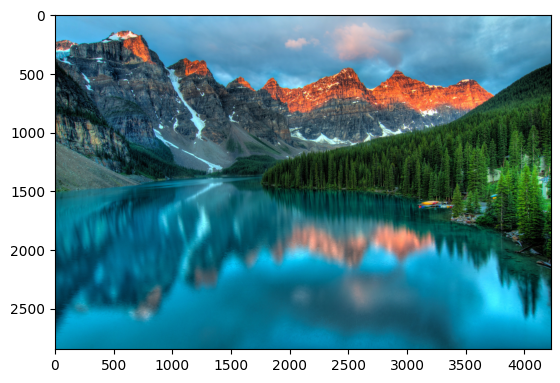

In [24]:
from timeit import default_timer as timer 
start_time = timer()
image_array=base64_to_numpy(image4)
image_array
plt.imshow(image_array)
end_time =timer()

In [25]:
end_time-start_time

0.39201417799995397